+ Outline:
    + find similary words
    + td-idf
    + word cloud
    + boolean search
    + build search engine

## 1. Search Tree -> Similar Words
+ 如何根据词向量找到近义词？

### 1.1 读取语料，切词

In [1]:
import pandas as pd

In [2]:
csv_path = 'data/news_data.csv'

In [3]:
content = pd.read_csv(csv_path, encoding='gb18030')

In [4]:
content = content.fillna('')

In [5]:
news_content = content['content'].tolist()

In [6]:
len(news_content)

89611

In [7]:
import jieba

In [8]:
def cut(string):
    return ' '.join(jieba.cut(string))

In [11]:
cut('这是一个测试')

Building prefix dict from /Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/jieba/dict.txt ...
Dumping model to file cache /var/folders/jh/b14_bh2n1753x9hvqr8zhtg40000gn/T/jieba.cache
Loading model cost 2.3054680824279785 seconds.
Prefix dict has been built succesfully.


'这是 一个 测试'

In [9]:
import re

In [10]:
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [12]:
token('这是一个测试\n\n\n')

['这是一个测试']

In [11]:
news_content = [token(n) for n in news_content]

In [12]:
news_content[0]

['此外',
 '自本周',
 '6月12日',
 '起',
 '除小米手机6等15款机型外',
 '其余机型已暂停更新发布',
 '含开发版',
 '体验版内测',
 '稳定版暂不受影响',
 '以确保工程师可以集中全部精力进行系统优化工作',
 '有人猜测这也是将精力主要用到MIUI',
 '9的研发之中',
 'MIUI',
 '8去年5月发布',
 '距今已有一年有余',
 '也是时候更新换代了',
 '当然',
 '关于MIUI',
 '9的确切信息',
 '我们还是等待官方消息']

In [13]:
news_content = [''.join(n) for n in news_content]

In [14]:
news_content = [cut(n) for n in news_content]

Building prefix dict from /Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/jieba/dict.txt ...
Dumping model to file cache /var/folders/jh/b14_bh2n1753x9hvqr8zhtg40000gn/T/jieba.cache
Loading model cost 1.6289889812469482 seconds.
Prefix dict has been built succesfully.


In [15]:
news_content[0]

'此外 自 本周 6 月 12 日起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI9 的 研发 之中 MIUI8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI9 的 确切 信息 我们 还是 等待 官方消息'

In [19]:
news_content[1]

'骁龙 835 作为 唯一 通过 Windows10 桌面 平台 认证 的 ARM 处理器 高通 强调 不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心 相反 他们 正 联手 微软 找到 一种 适合 桌面 平台 的 兼顾 性能 和 功耗 的 完美 方案 报道 称 微软 已经 拿到 了 一些 新 的 源码 以便 Windows10 更好 地 理解 biglittle 架构 资料 显示 骁龙 835 作为 一款 集成 了 CPUGPU 基带 蓝牙 WiFi 的 SoC 比 传统 的 Wintel 方案 可以 节省 至少 30 的 PCB 空间 按计划 今年 Q4 华硕 惠普 联想 将 首发 骁龙 835Win10 电脑 预计 均 是 二合一 形态 的 产品 当然 高通 骁龙 只是 个 开始 未来 也许 还 能 见到 三星 Exynos 联发科 华为 麒麟 小米 澎湃 等 进入 Windows10 桌面 平台'

###  1.2 训练词向量

In [29]:
with open('data/news-sentence-cut.txt', 'w') as f:
    for n in news_content:
        f.write(n + '\n')

In [30]:
from gensim.models import Word2Vec

In [32]:
from gensim.models.word2vec import LineSentence

In [35]:
news_word2vec = Word2Vec(LineSentence('data/news-sentence-cut.txt'), size=35, workers=8)

/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [38]:
news_word2vec.most_similar('葡萄牙', topn=20)

/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('摩洛哥', 0.8715903162956238),
 ('捷克', 0.8703978657722473),
 ('克罗地亚', 0.8610889911651611),
 ('意大利', 0.8580445051193237),
 ('拉脱维亚', 0.8553422093391418),
 ('罗马尼亚', 0.8322506546974182),
 ('瑞士', 0.828491747379303),
 ('比什凯克', 0.8055189847946167),
 ('巴林', 0.8042868375778198),
 ('斯洛文尼亚', 0.8036319017410278),
 ('比利时', 0.8021694421768188),
 ('伊斯坦布尔', 0.7945356965065002),
 ('里斯本', 0.7934140563011169),
 ('乌拉圭', 0.7933889627456665),
 ('巴塞罗那', 0.7908939123153687),
 ('丹麦', 0.7860475778579712),
 ('巴拉圭', 0.7846885919570923),
 ('西班牙', 0.7840219736099243),
 ('奥地利', 0.7815566062927246),
 ('匈牙利', 0.7785544395446777)]

In [39]:
news_word2vec.most_similar('篮球', topn=20)

/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('NBA', 0.7907575368881226),
 ('足球', 0.7721332311630249),
 ('田径', 0.7000782489776611),
 ('排球', 0.6983376145362854),
 ('猛龙', 0.6946298480033875),
 ('CBA', 0.6914166808128357),
 ('羽毛球', 0.679258406162262),
 ('总决赛', 0.6665500402450562),
 ('常规赛', 0.6580502986907959),
 ('乒乓球', 0.6564846634864807),
 ('冰球', 0.6552965641021729),
 ('季后赛', 0.6536163091659546),
 ('NHL', 0.6517461538314819),
 ('拳击', 0.6485042572021484),
 ('马刺', 0.6477504968643188),
 ('亚锦赛', 0.6425825953483582),
 ('灰熊胜', 0.6384602785110474),
 ('赛况', 0.6324735879898071),
 ('搏击', 0.6278903484344482),
 ('戴资颖夺', 0.6234531998634338)]

+ **总结**：
    + 有些错误的词原因可能是分词的问题
    + 数据量越多，效果越好，如果维基百科加进来训练，那么同义词就要好很多；

In [41]:
news_word2vec.most_similar('意大利', topn=50)

/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('葡萄牙', 0.8580445051193237),
 ('比利时', 0.8396793603897095),
 ('捷克', 0.8365641832351685),
 ('西班牙', 0.8323151469230652),
 ('瑞士', 0.8228452205657959),
 ('德国', 0.7958471775054932),
 ('拉脱维亚', 0.7851091623306274),
 ('摩洛哥', 0.7817844152450562),
 ('南非', 0.7760849595069885),
 ('加拿大', 0.7754005789756775),
 ('苏格兰', 0.7727044820785522),
 ('奥地利', 0.7645445466041565),
 ('保加利亚', 0.7611852884292603),
 ('基辅', 0.7602941989898682),
 ('法国', 0.7566233277320862),
 ('波兰', 0.7554436922073364),
 ('丹麦', 0.7516077160835266),
 ('罗马', 0.7515468001365662),
 ('俄罗斯', 0.7492324113845825),
 ('巴塞罗那', 0.745198130607605),
 ('罗马尼亚', 0.7442336082458496),
 ('瑞典', 0.7389825582504272),
 ('新加坡', 0.7384875416755676),
 ('匈牙利', 0.7375882863998413),
 ('墨西哥', 0.7355047464370728),
 ('巴林', 0.7337661385536194),
 ('津巴布韦', 0.72968590259552),
 ('澳大利亚', 0.7223790884017944),
 ('阿联酋', 0.7190980911254883),
 ('秘鲁', 0.7162296772003174),
 ('柏林', 0.7151482701301575),
 ('洛杉矶', 0.714961051940918),
 ('乌克兰', 0.7143062949180603),
 ('伊斯坦布尔', 0.70970547

In [42]:
news_word2vec.most_similar('捷克', topn=20)

/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('罗马尼亚', 0.8810051083564758),
 ('葡萄牙', 0.8703978657722473),
 ('拉脱维亚', 0.8634912967681885),
 ('奥地利', 0.839267909526825),
 ('意大利', 0.8365641832351685),
 ('丹麦', 0.8290891647338867),
 ('比利时', 0.82896888256073),
 ('巴林', 0.8244859576225281),
 ('斯洛文尼亚', 0.8135548830032349),
 ('保加利亚', 0.8064537048339844),
 ('匈牙利', 0.8039567470550537),
 ('塞内加尔', 0.8026608228683472),
 ('克罗地亚', 0.800875186920166),
 ('津巴布韦', 0.8001203536987305),
 ('立陶宛', 0.7937713861465454),
 ('波兰', 0.7925373911857605),
 ('巴拉圭', 0.7925109267234802),
 ('南非', 0.7889361381530762),
 ('伊斯坦布尔', 0.7877025604248047),
 ('挪威', 0.7692540884017944)]

In [43]:
news_word2vec.most_similar('说', topn=50)

/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('表示', 0.90391606092453),
 ('认为', 0.880420982837677),
 ('指出', 0.8333116769790649),
 ('看来', 0.8080568313598633),
 ('坦言', 0.8048000335693359),
 ('告诉', 0.7791320085525513),
 ('介绍', 0.7710656523704529),
 ('透露', 0.7492237091064453),
 ('称', 0.7476943731307983),
 ('明说', 0.7307352423667908),
 ('文说', 0.7187764644622803),
 ('所说', 0.7004677057266235),
 ('中说', 0.6839670538902283),
 ('强调', 0.681229293346405),
 ('讨薪', 0.6165903210639954),
 ('时说', 0.6060189604759216),
 ('深有体会', 0.600953996181488),
 ('写道', 0.5958337783813477),
 ('特别强调', 0.5948288440704346),
 ('纳说', 0.5865285396575928),
 ('地说', 0.5853909254074097),
 ('提到', 0.5789912343025208),
 ('称赞', 0.5781077146530151),
 ('问', 0.5768464803695679),
 ('的话', 0.5735576748847961),
 ('洪说', 0.571426272392273),
 ('不明智', 0.5606207251548767),
 ('所指', 0.560152530670166),
 ('写信给', 0.5568540096282959),
 ('婆罗洲', 0.5533045530319214),
 ('说道', 0.5520904064178467),
 ('建议', 0.5490243434906006),
 ('陈说', 0.5469501614570618),
 ('相信', 0.5437232255935669),
 ('如是说', 0.53872

In [44]:
news_word2vec.most_similar('认为', topn=10)

/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('指出', 0.9087444543838501),
 ('表示', 0.9007185101509094),
 ('说', 0.880420982837677),
 ('看来', 0.8448085188865662),
 ('坦言', 0.7928268313407898),
 ('称', 0.7844308614730835),
 ('强调', 0.7297748327255249),
 ('透露', 0.726569652557373),
 ('普遍认为', 0.717379093170166),
 ('表明', 0.6822716593742371)]

In [45]:
from collections import defaultdict

In [55]:
def get_related_words(initial_words, model):
    """
    @initial_words are initial words we already know
    @model  is the word2vec model
    """
    unseen = initial_words
    seen = defaultdict(int)
    
    max_size = 500
    while unseen and len(seen) < max_size:
        if len(seen) % 50 == 0:
            print('seen length:{}'.format(len(seen)))
        
        node = unseen.pop(0)
        new_expanding = [w for w, s in model.most_similar(node, topn=20)]
        unseen += new_expanding
        seen[node] += 1
    return seen

In [56]:
related_words = get_related_words(['说', '表示'], news_word2vec)

seen length:0


/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  from ipykernel import kernelapp as app


seen length:50
seen length:50
seen length:100
seen length:150
seen length:200
seen length:250
seen length:250
seen length:300
seen length:350
seen length:350
seen length:400
seen length:450


In [50]:
len(news_word2vec.wv.vocab)

97928

In [60]:
# 根据出现次数排序
sorted(related_words.items(), key=lambda x:x[1], reverse=True)

[('指出', 83),
 ('表示', 82),
 ('认为', 78),
 ('说', 75),
 ('坦言', 75),
 ('看来', 65),
 ('透露', 62),
 ('所说', 57),
 ('特别强调', 50),
 ('强调', 49),
 ('介绍', 46),
 ('明说', 40),
 ('告诉', 38),
 ('称', 37),
 ('中说', 35),
 ('提到', 32),
 ('建议', 31),
 ('呼吁', 28),
 ('讨薪', 25),
 ('不明智', 25),
 ('文说', 24),
 ('写道', 24),
 ('表明', 24),
 ('提出', 23),
 ('直言', 23),
 ('普遍认为', 21),
 ('深有体会', 18),
 ('提及', 18),
 ('声称', 18),
 ('时说', 17),
 ('地说', 17),
 ('洪说', 17),
 ('说道', 17),
 ('阐述', 17),
 ('中称', 16),
 ('证实', 16),
 ('反映', 14),
 ('但是', 14),
 ('写信给', 14),
 ('承认', 13),
 ('深刻理解', 13),
 ('供图', 11),
 ('解释', 11),
 ('说明', 10),
 ('事实上', 10),
 ('还是', 10),
 ('而言', 10),
 ('接受', 10),
 ('还称', 10),
 ('重申', 10),
 ('主张', 10),
 ('来说', 9),
 ('来讲', 9),
 ('觉得', 9),
 ('政务司', 9),
 ('列举', 9),
 ('说法', 9),
 ('暗示', 9),
 ('引用', 9),
 ('描述', 9),
 ('称赞', 9),
 ('祁', 8),
 ('回答', 8),
 ('强调指出', 8),
 ('批评', 8),
 ('但', 8),
 ('纳说', 7),
 ('解读', 7),
 ('知情', 7),
 ('宣称', 7),
 ('深有感触', 7),
 ('夸奖', 7),
 ('胡说八道', 7),
 ('怼', 7),
 ('时称', 7),
 ('上称', 7),
 ('公开批评', 7),
 ('明确提出', 

## TODO
- 还有很多可以优化的地方
- seen 打分 优化，不只是加1
- 重复搜索使用 Dynamic Programming

----
## 2. TF-IDF Key words
+ 任意输入一篇文章，提取出关键字(key words)

In [29]:
content.head()

id      author                  source  \
0  89617              快科技@http://www.kkj.cn/   
1  89616              快科技@http://www.kkj.cn/   
2  89615              快科技@http://www.kkj.cn/   
3  89614                                 新华社   
4  89613  胡淑丽_MN7479                   深圳大件事   

                                             content  \
0  此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...   
1  骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...   
2  此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...   
3    这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n   
4  （原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...   

                                             feature  \
0  {"type":"科技","site":"cnbeta","commentNum":"37"...   
1  {"type":"科技","site":"cnbeta","commentNum":"15"...   
2  {"type":"科技","site":"cnbeta","commentNum":"18"...   
3  {"type":"国际新闻","site":"环球","commentNum":"0","j...   
4  {"type":"新闻","site":"网易热门","commentNum":"978",...   

                           title  \
0           小米MIUI 9首批机型曝光：共计15款   
1     骁龙835在Windows 10上的性能表现有望改善   
2      一加手机5细节曝光：3300mAh、充半小时用1天   
3  葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）   
4       44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随   

                                                 url  
0     http://www.cnbeta.com/articles/tech/623597.htm  
1     http://www.cnbeta.com/articles/tech/623599.htm  
2     http://www.cnbeta.com/articles/tech/623601.htm  
3  http://world.huanqiu.com/hot/2017-06/10866126....  
4  http://news.163.com/17/0618/00/CN617P3Q0001875...

In [30]:
news_content[0]

'此外 自 本周 6 月 12 日起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI9 的 研发 之中 MIUI8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI9 的 确切 信息 我们 还是 等待 官方消息'

In [18]:
def document_frequency(word):
    return sum(1 for n in news_content if word in n)

In [31]:
document_frequency('小米')

100

In [32]:
document_frequency('本周')

438

In [30]:
document_frequency('的')

70342

In [19]:
import math

In [20]:
def idf(word):
    return math.log10(len(news_content)/ document_frequency(word))

In [34]:
idf('的')

0.1051466115514474

In [35]:
idf('小米')

2.9523613237924735

In [21]:
def tf(word, document):
    words = document.split()
    return sum(1 for w in words if w == word)

In [36]:
news_content[11]

'巨丰 早评 市场 将 再次 探底 巨丰 观点 周四 大盘 冲高 回落 2500 余 只 个股 下跌 上证 50 沪 深 300 指数 顽强 收红 早盘 大盘 低开 高 走 展开 反弹 沪 指 冲破 120 日 均线 压力 位 午后 大盘 跳水 个股 普跌 盘面 上 保险 电力 银行 民航机场 券商 房地产 人工智能 迪士尼 网络安全 等 板块 涨幅 居前 雄安 新区 福州 新区 医疗器械 丝绸之路 等 跌幅 居前 金融股 全线 大涨 保险 板块 涨 3 新华 保险 中国 太保 中国 人寿 涨 4 中国 平安 涨 2 西水股份 天茂 集团 盘中 大涨 7 以上 银行 板块 涨 2 招商银行 大涨 8 贵阳 银行 兴业银行 浦发银行 兴业银行 等 涨幅 居前 金融股 是 A股 纳入 MSCI 指数 的 受益者 后市 可以 逢 低 关注 盘中 万达 电影 复星 医药 等 白马股 闪崩 导致 午后 市场 出现 大幅 跳水 盘后 消息 银监会 于 6 月 中旬 要求 各家 银行 排查 包括 万达 海航 集团 复星 浙江 罗森 内里 在内 数家 企业 的 授信 及 风险 分析 排查 对象 多 是 近年来 海外投资 比较 凶猛 在 银行业 敞口 较大 的 民营企业 集团 巨丰 投顾 认为 自 5 月 以来 大盘 已经 走出 了 3 重底 的 走势 并 开启 中级 反弹 行情 沪 指 在 上证 50 及 白马股 推动 下 率先 反弹 但 遭遇 60 日 120 日 均线 强 压力 而 出现 调整 MSCI 纳入 A股 后 沪 深 300 指数 创 17 个 月 新高 但 2500 余股 下跌 市场 分化 明显 随着 6 月末 市场 流动性 紧张 的 可能 出现 市场 将 再次出现 探底 建议 投资者 重点 关注 半年报 大幅 预增 的 错 杀 股 和 具备 估值 优势 的 大 蓝筹 天信 投资 尾盘 跳水 原因 揭秘 伏击 的 品种 曝光 周四 市场 点评 沪 深 两市 早盘 纷纷 低开 但是 开盘 之后 权重 板块 崛起 其中 保险 和 银行 表现 尤其 明显 低矮 动 股指 快速 拉升 并 顺势 突破 了 60 日 均线 和 半年线 的 束缚 在 主板 拉升 的 过程 中 市场 的 分化 格局 也 较 明显 题材 板块 和 创业板 表现 相对 较弱 不过 虽然 市场 在 早盘

In [33]:
tf('市场', news_content[11])

20

In [34]:
tf('银行', news_content[11])

6

In [35]:
tf('创业板', news_content[11])

6

In [36]:
idf('市场')

1.0676225860228419

In [45]:
idf('银行')

1.4550169427748936

In [47]:
idf('创业板')

2.506757120518876

In [22]:
def get_keywords_of_a_document(document):
    words = document.split()
    tfidf = [(w, tf(w, document) * idf(w)) for w in words]
    tfidf = sorted(tfidf, key=lambda x: x[1], reverse=True)
    return tfidf

### 可以优化的点
+ 减少计算时间；
+ 重复计算的单词可以保存；

In [37]:
get_keywords_of_a_document(news_content[11])

[('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('市场', 21.352451720456838),
 ('股指', 18.183467417442838),
 ('股指', 18.183467417442838),
 ('股指', 18.183467417442838),
 ('股指', 18.183467417442838),
 ('股指', 18.183467417442838),
 ('股指', 18.183467417442838),
 ('股指', 18.183467417442838),
 ('股指', 18.183467417442838),
 ('周四', 17.26088617439966),
 ('周四', 17.26088617439966),
 ('周四', 17.26088617439966),
 ('周四', 17.26088617439966),
 ('周四', 17.26088617439966),
 ('周四', 17.26088617439966),
 ('均线', 15.505514875

In [59]:
# 使用prun计算程序耗时，找到可以优化的点
%prun get_keywords_of_a_document(news_content[11])

In [39]:
news_key_words = get_keywords_of_a_document(news_content[101])

## 3. Word Cloud
+ 关键词展示
+ [https://github.com/amueller/word_cloud](https://github.com/amueller/word_cloud)
+ wordcloud支持中文需要安装字体：[https://github.com/Computing-Intelligence/datasource/blob/master/SourceHanSerifSC-Regular.otf](https://github.com/Computing-Intelligence/datasource/blob/master/SourceHanSerifSC-Regular.otf)

In [20]:
import wordcloud

In [21]:
wc = wordcloud.WordCloud('⁨/Users/liling/Documents/Softwares/wordcloud/SourceHanSerifSC-Regular.otf')

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# 转换成dict
news_key_words_dict = {w:score for w, score in news_key_words}

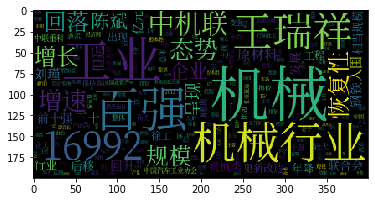

In [28]:
# wordcloud展示1
plt.imshow(wc.generate_from_frequencies(news_key_words_dict))

In [42]:
# wordcloud展示2
shenzhen_social_news = get_keywords_of_a_document(news_content[4])

In [43]:
shenzhen_social_news

[('刘青', 67.12860103609216),
 ('刘青', 67.12860103609216),
 ('刘青', 67.12860103609216),
 ('刘青', 67.12860103609216),
 ('刘青', 67.12860103609216),
 ('刘青', 67.12860103609216),
 ('刘青', 67.12860103609216),
 ('刘青', 67.12860103609216),
 ('刘青', 67.12860103609216),
 ('刘青', 67.12860103609216),
 ('刘青', 67.12860103609216),
 ('刘青', 67.12860103609216),
 ('刘青', 67.12860103609216),
 ('刘青', 67.12860103609216),
 ('刘青', 67.12860103609216),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),
 ('女子', 49.805410612821845),


In [47]:
shenzhen_social_news_dict = {w:score for w, score in shenzhen_social_news}

In [18]:
from PIL import Image
import numpy as np

In [62]:
wc_mask = np.array(Image.open('img/wordcloud_bg.png'))

In [68]:
wordcloud_with_mask = wordcloud.WordCloud(font_path='/Users/liling/Documents/Softwares/wordcloud/SourceHanSerifSC-Regular.otf',
                                         mask=wc_mask,
                                         background_color='white')

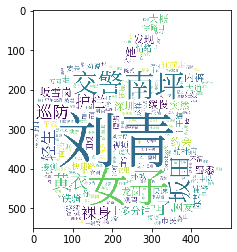

In [69]:
plt.imshow(wordcloud_with_mask.generate_from_frequencies(shenzhen_social_news_dict))

## 4.  TF-IDF Vectorized

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
vectorized = TfidfVectorizer(max_features=10000)

In [140]:
news_content[:10]

['此外 自 本周 6 月 12 日起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI9 的 研发 之中 MIUI8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI9 的 确切 信息 我们 还是 等待 官方消息',
 '骁龙 835 作为 唯一 通过 Windows10 桌面 平台 认证 的 ARM 处理器 高通 强调 不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心 相反 他们 正 联手 微软 找到 一种 适合 桌面 平台 的 兼顾 性能 和 功耗 的 完美 方案 报道 称 微软 已经 拿到 了 一些 新 的 源码 以便 Windows10 更好 地 理解 biglittle 架构 资料 显示 骁龙 835 作为 一款 集成 了 CPUGPU 基带 蓝牙 WiFi 的 SoC 比 传统 的 Wintel 方案 可以 节省 至少 30 的 PCB 空间 按计划 今年 Q4 华硕 惠普 联想 将 首发 骁龙 835Win10 电脑 预计 均 是 二合一 形态 的 产品 当然 高通 骁龙 只是 个 开始 未来 也许 还 能 见到 三星 Exynos 联发科 华为 麒麟 小米 澎湃 等 进入 Windows10 桌面 平台',
 '此前 的 一加 3T 搭载 的 是 3400mAh 电池 DashCharge 快充 规格 为 5V4A 至于 电池 缩水 可能 与 刘作 虎 所说 一加 手机 5 要 做 市面 最 轻薄 大屏 旗舰 的 设定 有关 按照 目前 掌握 的 资料 一加 手机 5 拥有 55 寸 1080P 三星 AMOLED 显示屏 6G8GBRAM64GB128GBROM 双 1600 万 摄像头 备货 量 惊喜 根据 京东 泄露 的 信息 一加 5 起 售价 是 xx99 元 应该 是 在 279928992999 中 的 某个',
 '这是 6 月 18 日 在 葡萄牙 中部 大 佩德罗 冈 地区 拍摄 的 被 森林 大火 烧毁 的 汽车 新华社 记者 张立 云摄',
 '原 标题 44 岁 女子 跑 深圳 约会

In [141]:
# sample_number = 10000
# sub_samples = news_content[:sample_number]

In [25]:
X = vectorized.fit_transform(news_content)

In [26]:
X.shape

(89611, 10000)

In [208]:
vectorized.vocabulary_

{'此外': 6208,
 '本周': 5899,
 '12': 32,
 '日起': 5632,
 '小米': 3996,
 '手机': 4891,
 '15': 46,
 '其余': 1841,
 '暂停': 5753,
 '更新': 5773,
 '发布': 2628,
 '开发': 4425,
 '影响': 4554,
 '确保': 7352,
 '工程师': 4158,
 '可以': 2726,
 '集中': 9615,
 '全部': 1745,
 '精力': 7686,
 '进行': 9115,
 '工作': 4140,
 '有人': 5819,
 '猜测': 6901,
 '主要': 934,
 '研发': 7333,
 '之中': 955,
 '去年': 2543,
 '一年': 327,
 '时候': 5649,
 '当然': 4531,
 '关于': 1819,
 '信息': 1556,
 '我们': 4824,
 '还是': 9061,
 '等待': 7623,
 '作为': 1452,
 '唯一': 2960,
 '通过': 9224,
 '平台': 4284,
 '认证': 8560,
 '强调': 4507,
 '不会': 572,
 '因为': 3038,
 '考虑': 8004,
 '性能': 4665,
 '核心': 6078,
 '相反': 7228,
 '他们': 1261,
 '联手': 8042,
 '微软': 4601,
 '找到': 4964,
 '一种': 372,
 '适合': 9167,
 '兼顾': 1862,
 '完美': 3798,
 '方案': 5560,
 '报道': 5037,
 '已经': 4183,
 '拿到': 5113,
 '一些': 279,
 '以便': 1276,
 '更好': 5770,
 '理解': 6987,
 '架构': 6034,
 '资料': 8796,
 '显示': 5722,
 '一款': 359,
 '集成': 9621,
 '传统': 1370,
 '节省': 8212,
 '至少': 8145,
 '30': 102,
 '空间': 7512,
 '按计划': 5142,
 '今年': 1234,
 '联想': 8041,
 '首发': 9813,
 '电脑': 70

In [209]:
X[0]

<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 35 stored elements in Compressed Sparse Row format>

In [210]:
news_content[0]

'此外 自 本周 6 月 12 日起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI9 的 研发 之中 MIUI8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI9 的 确切 信息 我们 还是 等待 官方消息'

In [211]:
len(news_content[0])

225

In [212]:
np.where(X[0].toarray()) # get the positions which values are not zeros

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([  32,   46,  327,  934,  955, 1556, 1745, 1819, 1841, 2543, 2628,
        2726, 3996, 4140, 4158, 4425, 4531, 4554, 4824, 4891, 5632, 5649,
        5753, 5773, 5819, 5899, 6208, 6901, 7333, 7352, 7623, 7686, 9061,
        9115, 9615]))

In [216]:
X.toarray()[0][32]

0.10802738241250673

In [217]:
import random

In [218]:
document_id_1, document_id_2 = random.randint(0, 1000), random.randint(0, 1000)

In [219]:
document_id_1, document_id_2

(14, 390)

In [220]:
news_content[document_id_1]

'6 月 21 日 MSCI 在 官网 发布公告 称 从 明年 6 月 起 将 中国 A股 纳入 MSCI 新兴 市场 指数 和 MSCIACWI 全球 指数 这 恐怕 是 近半年 来 中国 资本 市场 上 最 令人振奋 的 消息 A股 早 在 2013 年 6 月 就 已 纳入 新兴 市场 指数 的 候选 列表 中 但 此后 几年 都 因为 配额 分配 资本 流动 限制 资本 利得税 等 所谓 原因 而 遭 否决 尤其 是 在 2016 年 第三次 闯关 失败 后 中国 投资者 和 相关 监管部门 似乎 对 A股 入摩 已 心灰意冷 甚至 连 证监会 分管 国际 合作 的 副 主席 方 星海 都 在 今年 一月份 的 时候 表示 中国 与 MSCI 在 股指 期货 上 的 观点 存在 分歧 中国 并 不 急于 加入 MSCI 全球 指数 然而 事情 最终 出现 了 转机 今年 3 月 MSCI 提出 纳入 A股 的 新 方案 将 A股 的 权重 由原 计划 的 1 降低 至 05 并 将 指数 纳入 A股 的 数量 由 原来 计划 的 448 只 减至 169 只 这 一 举动 其实 已经 预示 了 A股 今年 大 概率 入摩 从 6 月 21 日 宣布 的 结果 来看 相比 3 月份 的 调整 可以 说 还有 惊喜 最终 确定 的 权重 为 073 股票 数量 为 222 只 就 具体 的 时间表 而言 MSCI 新兴 市场 A股 纳入计划 分 两步走 第一步 是 在 2018 年 5 月 按 25 的 指数 纳入 因子 indexinclusionfactor 给予 A股 037 的 权重 第二步 是 在 2018 年 8 月 按 5 的 因子 将 权重 提高 至 计划 的 073 从 现在 到 A股 正式 进入 MSCI 新兴 市场 指数 尚有 一年 时间 因此 短期 来看 这一 事件 不会 马上 起到 提振 国内 股市 的 作用 另一方面 大部分 机构 预计 本次 入摩 将 为 中国 带来 约 1000 亿美元 的 资金 流入 相比 于 标的 公司 近 2 万亿美元 的 市值 来说 这些 资金 并 不能 在 市场 上 掀起 太大 的 涟漪 只有 当 纳入 因子 进一步提高 时 根据 MSCI 在 2016 年 提出 的 A股 纳入计划 纳入 因子 达到 1

In [221]:
news_content[document_id_2]

'通过 了 资格 审查 笔试 面试 成绩 第一 纪元 以为 自己 铁定 要 被 录用 了 不料 突然 接到 通知 专业 不符 她 的 录用 资格 被 江苏 徐州市 人 社局 取消 了 对此 从 电话 抗议 到 局长 信箱 从 行政复议 到 司法 诉讼 纪元 的 申诉 绕 了 一圈 又 一圈 始终 在 维权 迷宫 里 兜圈子 中国青年报 6 月 21 日 事件 一出 各大 媒体 争相 报道 在 采访 时 三方 各执一词 纪元 的 研究生 专业 是 比较文学 与 世界 文学 而 此次 招考 要求 的 专业 是 中国 语言文学 纪元 表示 中国 找不出 一个 硕士 研究生 毕业证书 上 专业 那栏 写 着 中国 语言文学 自己 专业 符合 审核 标准 审核 单位 人 社局 工作人员 则 称 按照 2016 年 徐州市 公务员 招录 考试 专业 参考 目录 纪元 所学 专业 比较文学 与 世界 文学 与 中国 语言文学 专业 处于 并列 关系 不予认定 合法 合理 用人单位 徐州市 城乡 建设局 向 人 社局 说明 纪元 所学 专业 属于 招聘 科目 范围 应 重新考虑 公说公有理 婆说婆有理 每 一方 似乎 都 是 按 规矩 办事 没 毛病 可 对 纪元 来说 进 编制 是 一辈子 的 事 让 个人 来 背 专业 认定 模糊 这口 黑锅 明显 是 不 恰当 的 点击 图片 进入 下 一页 人 社局 因 专业 不符 取消 报考 人 录用 资格 是 职责所在 根据 徐州市 市区 属 事业单位 2016 上半年 公开 招聘 公告 规定 各 主管部门 单位 负责 本 部门 单位 的 报考 资格 复审 把关 工作 市 组织 人 社部 负责 监督 指导 和 审判 工作'

In [222]:
vecotor_of_d1 = X[document_id_1].toarray()[0]

In [223]:
vecotor_of_d2 = X[document_id_2].toarray()[0]

In [234]:
random_choose = random.randint(0, 1000)
random_choose

369

In [235]:
news_content[random_choose]

'近日 刚刚 上任 的 苏宁 队史 最大 牌 外教 世界 名帅 卡佩罗 接受 了 央视 的 采访 Q 央视 记者 A 卡佩罗 Q 有 一些 人 质疑 说 两年 了 没有 做 主教练 在 一线 执教 是不是 不太 适应 我 知道 在 两年 时间 里 你 一直 在 欧洲 接触 着 足球 包括 是 欧冠 观察团 的 成员 重新 回到 一线 有没有 这种 担心 A 这 两年 不是 我 不 工作 是 我 不 愿意 去 工作 我 在 两年 之内 收到 了 非常 非常 多 的 俱乐部 的 邀请 但是 我 全都 拒绝 了 那么 我 选择 江苏 苏宁 是因为 苏宁 给 了 我 一个 非常 伟大 的 计划 我 跟 这里 有 一年 半 的 合同 为什么 我会 在 我 的 职业生涯 后期 还 在 接触 这样 一份 合同 呢 因为 我 希望 将 苏宁 这支 球队 打 造成 我 的 一支 好 的 球队 后 再 由 俱乐部 选择 合适 人选 我 再 把 它 交到 他 的 手上 Q 这样 短 的 时间 够不够 实现 这样 的 愿望 A 这个 球队 里面 有 非常 好 的 球员 他们 有 一定 的 价值 作为 主教练 来说 首先 我 了解 这个 球队 哪 一部分 需要 提高 以及 怎么 去 提高 我 相信 跟 我 的 教练 团队 包括 萨巴蒂 尼 先生 一起 找到 球队 的 问题 是 可以 在 短时间 内 解决 的 Q 看到 卡佩罗 先生 在 球场上 总是 表情 特别 严肃 但是 今天 接触 后 发现 他 的 笑容 很多 也 很 可爱 A 你们 看到 我 的 时候 那时 我 在 工作 状态 下 的 表情 但是 其实 我 在 日常生活 中 和 普通人 一样 我 也 会 有 我 开心 的 点 但是 在 工作 中 我 要 保持 大家 对 我 高度 的 尊重 以及 我 对 球队 高度 的 管理 Q 在 球队 里 需要 严肃 一点 让 球员 感到 害怕 A 所谓 的 尊重 呢 指 的 是 我们 队伍 时间 首先 大家 准时 准点 到达 训练场 队员 之间 的 相互尊重 队员 与 队员 之间 取得成功 或者 失败 之后 的 尊重 而 不是 我们 刚刚 所 讲 的 单单是 使 他们 害怕 因为 我 觉得 只有 这种 尊重 球队 才能 更加 团结 Q 大家 对 你 的 印象 都 是 实用主义 者 一球 小胜 就 可

+ 计算文章向量的相似度：

In [106]:
from scipy.spatial.distance import cosine

In [107]:
def distance(v1, v2):
    return cosine(v1, v2)

In [238]:
distance([1, 1], [2, 2])

0.0

In [239]:
distance(X[random_choose].toarray()[0], X[document_id_1].toarray()[0])

0.951514727321871

In [240]:
distance(X[random_choose].toarray()[0], X[document_id_2].toarray()[0])

0.9644908367789771

+ 第一个cosine更小说明和第一篇文章更近似。

In [125]:
# 查看和列表中所有文章的相似度排序
sorted(list(range(1000)), key=lambda i:distance(X[random_choose].toarray()[0], 
                                               X[i].toarray()[0]))

/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/scipy/spatial/distance.py:702: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


[12,
 74,
 275,
 53,
 72,
 113,
 102,
 55,
 85,
 78,
 41,
 66,
 125,
 118,
 80,
 31,
 27,
 30,
 57,
 95,
 122,
 4,
 48,
 63,
 71,
 656,
 110,
 36,
 76,
 111,
 25,
 90,
 8,
 60,
 67,
 65,
 52,
 61,
 73,
 20,
 94,
 47,
 62,
 58,
 56,
 34,
 109,
 46,
 0,
 22,
 19,
 97,
 116,
 59,
 26,
 21,
 14,
 7,
 108,
 96,
 29,
 86,
 32,
 43,
 98,
 68,
 87,
 99,
 42,
 54,
 1,
 49,
 84,
 123,
 5,
 64,
 6,
 93,
 70,
 23,
 40,
 69,
 104,
 79,
 83,
 92,
 35,
 81,
 9,
 2,
 105,
 11,
 121,
 91,
 17,
 101,
 120,
 112,
 106,
 119,
 33,
 44,
 50,
 28,
 114,
 75,
 37,
 124,
 45,
 38,
 15,
 115,
 10,
 117,
 24,
 107,
 82,
 89,
 13,
 77,
 18,
 3,
 16,
 39,
 51,
 88,
 100,
 103,
 228,
 218,
 140,
 131,
 298,
 263,
 242,
 305,
 281,
 312,
 314,
 135,
 141,
 291,
 286,
 227,
 150,
 247,
 245,
 178,
 166,
 522,
 190,
 694,
 401,
 138,
 130,
 267,
 332,
 809,
 903,
 700,
 129,
 972,
 146,
 221,
 886,
 896,
 463,
 735,
 950,
 318,
 859,
 220,
 127,
 485,
 541,
 643,
 782,
 609,
 482,
 225,
 842,
 456,
 410,
 669,
 534,


In [132]:
news_content[12]

'中新网 6 月 19 日电 据 外媒 报道 美国 底特律 一名 男子 1976 年 因为 一根 头发 被定 谋杀罪 监禁 41 年 后 终于 在 协助 下 成功 洗刷 罪名 于 本月 15 日 获释 据悉 61 岁 的 沃金斯 被控 在 1975 年 抢劫 25 岁 女子 伊薇特 并 将 其 枪杀 当年 20 岁 的 沃金斯 被 警方 逮捕 最后 被 以 一级 谋杀罪 定罪 而 他 被 定罪 的 关键 仅 是 在 现场 的 一根 头发 西 密西根 大学 库利 法学院 的 清白 项目 为了 协助 更 多 蒙受 冤狱 之苦 的 受刑人 积极 帮助 沃金斯 发现 当年 警局 实验室 的 分析师 基于 在 现场 找到 的 一根 头发 而 认定 该案 与 沃金斯 有关 清白 专案 总监 马拉 米 契尔说 根据 头发 定罪 不是 建立 在 科学 的 基础 上该 组织 今年 1 月 要求 法院 撤销 沃金斯 的 定罪 沃金斯 等待 41 年 后 终于 真相大白 被 获 撤销 罪名 后 走出 底特律 下城 的 韦恩郡 监狱 他 说 这 真 梦幻 令人 难以置信 但 我 感觉 很 好 我 早 料到 有 这 一天 但 想不到 要 等 41 年 那么 长 免责 声明 本文 仅 代表 作者 个人观点 与 环球网 无关 其 原创性 以及 文中 陈述 文字 和 内容 未经 本站 证实 对 本文 以及 其中 全部 或者 部分 内容 文字 的 真实性 完整性 及时性 本站 不 作 任何 保证 或 承诺 请 读者 仅作 参考 并 请 自行 核实 相关 内容'

In [133]:
news_content[74]

'免责 声明 本文 仅 代表 作者 个人观点 与 环球网 无关 其 原创性 以及 文中 陈述 文字 和 内容 未经 本站 证实 对 本文 以及 其中 全部 或者 部分 内容 文字 的 真实性 完整性 及时性 本站 不 作 任何 保证 或 承诺 请 读者 仅作 参考 并 请 自行 核实 相关 内容'

In [134]:
news_content[275]

'轿车 撞 上 大树 起火 20 岁 小伙 身亡 南国 都市报 6 月 18 日讯 记者 陈康 通讯员 樊骁文图 18 日 凌晨 琼海市 长坡 镇 灵文 加线 海口 灵山 文昌 琼海 嘉积 路段 发生 一起 交通事故 一名 男子 驾车 撞 上 路边 大树 后 轿车 自燃 起火 男子 被困 车 内 遇难 轿车 被 完全 烧毁 18 日 凌晨 3 时 55 分 琼海 消防支队 指挥 中心 接到 报警 称 位于 琼海市 长坡 镇 往嘉积 方向 发生 一起 交通事故 请求 救援 琼海 消防支队 立即 调派 特勤 中队 3 辆 消防车 和 12 名 指战员 赶赴现场 实施 扑救 4 时 51 分明 火 被 彻底 扑灭 撬开 车门 后 确认 被困 车内 的 一人 死亡事故 原因 仍 在 调查 中据 警方 初步 调查 死者 陈某 文昌 重兴人 20 多岁 事发 时 他 独自一人 驾驶 小轿车 碰撞 路边 树木 后 车辆 起火 一名 开车 经过 的 男子 看到 车祸 现场 后 报警 免责 声明 本文 仅 代表 作者 个人观点 与 环球网 无关 其 原创性 以及 文中 陈述 文字 和 内容 未经 本站 证实 对 本文 以及 其中 全部 或者 部分 内容 文字 的 真实性 完整性 及时性 本站 不 作 任何 保证 或 承诺 请 读者 仅作 参考 并 请 自行 核实 相关 内容'

## 5. Boolean Search

In [1]:
# 查看二进制表示
bin(9)

'0b1001'

## 6. Build Search Engine
```
Input: Words
Output: Documents
```

In [96]:
def naive_search(keywords):
    new_ids = [i for i, n in enumerate(news_content) if all(w in n for w in keywords)]

In [88]:
len(news_content)

89611

In [89]:
set(np.where(X[0].toarray()[0])[0])

{32,
 46,
 327,
 934,
 955,
 1556,
 1745,
 1819,
 1841,
 2543,
 2628,
 2726,
 3996,
 4140,
 4158,
 4425,
 4531,
 4554,
 4824,
 4891,
 5632,
 5649,
 5753,
 5773,
 5819,
 5899,
 6208,
 6901,
 7333,
 7352,
 7623,
 7686,
 9061,
 9115,
 9615}

+ input word -> the documents which contain the word
+ 

In [90]:
X.shape

(89611, 10000)

In [91]:
transposed_X = X.transpose().toarray()

In [92]:
np.where(transposed_X[0])

(array([   24,    71,    93,   129,   241,   261,   611,   643,   808,
          826,   837,   882,   970,  1032,  1089,  1130,  1160,  1547,
         1622,  1656,  1671,  1943,  2192,  2394,  2496,  2731,  2849,
         2867,  2880,  2956,  3200,  3223,  3261,  3345,  3367,  3438,
         3541,  3645,  3660,  3902,  3950,  3988,  4061,  4376,  4386,
         4554,  4590,  4686,  4831,  5040,  5229,  5282,  5500,  5695,
         5827,  5862,  6014,  6560,  6829,  6836,  6842,  6847,  6854,
         6859,  7219,  7459,  7495,  7503,  7653,  9115,  9973,  9995,
        10063, 12165, 12216, 12404, 12740, 12744, 13284, 13862, 14797,
        15737, 15763, 15951, 15955, 15959, 15961, 19861, 21408, 24643,
        24662, 24986, 25042, 25274, 25396, 25463, 25548, 25581, 25744,
        25841, 26331, 26629, 26720, 26862, 27589, 29427, 29661, 31106,
        31111, 31162, 31251, 31391, 31417, 31726, 31949, 31998, 32307,
        32445, 32822, 32823, 34623, 36140, 37584, 37682, 37765, 38873,
      

In [93]:
word_2_id = vectorized.vocabulary_

In [94]:
word_2_id['美军']

7944

In [51]:
id_2_word = {d:w for w, d in word_2_id.items()}

In [54]:
id_2_word[660]

'专项'

In [56]:
set(np.where(transposed_X[660])[0])

{6147,
 4100,
 32771,
 67589,
 34823,
 73737,
 6154,
 24587,
 61453,
 4112,
 18452,
 26644,
 55319,
 6172,
 47133,
 34846,
 51228,
 53276,
 73761,
 88097,
 4132,
 16420,
 22564,
 47142,
 18473,
 26665,
 26666,
 59436,
 26669,
 61484,
 61485,
 4146,
 14388,
 53,
 18486,
 66361,
 36927,
 45120,
 51268,
 81989,
 26697,
 28746,
 51304,
 6221,
 14413,
 71759,
 41041,
 47189,
 61530,
 69726,
 63585,
 20579,
 20580,
 2149,
 26724,
 4199,
 41062,
 43113,
 45162,
 49255,
 30828,
 43116,
 49261,
 43119,
 51303,
 26737,
 57452,
 59499,
 67694,
 73845,
 67704,
 61561,
 73848,
 59515,
 2172,
 6270,
 2175,
 20610,
 6275,
 41090,
 26757,
 43139,
 86154,
 71820,
 75916,
 4240,
 18577,
 6290,
 61585,
 65685,
 57494,
 65686,
 76149,
 73883,
 41116,
 41118,
 67743,
 2210,
 26786,
 49318,
 26792,
 49324,
 69804,
 69806,
 49327,
 6323,
 55476,
 2229,
 35006,
 55488,
 67777,
 43205,
 47301,
 49349,
 47304,
 53446,
 65736,
 67785,
 43213,
 73934,
 78029,
 84177,
 6356,
 67796,
 88278,
 6360,
 88281,
 61659,


In [120]:
def search_engine(query):
    """
    @query is the searched words, splited by space
    @return is the related documents which ranked by tf-idf similarity
    """
    words = query.split()
    candidates_ids = [word_2_id[w] for w in words]
    
    documents_ids = [
        set(np.where(transposed_X[_id])[0]) for _id in candidates_ids
    ]
    merged_documents = reduce(and_, documents_ids)
    
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]
    sorted_documents_id = sorted(merged_documents, key=lambda i:distance(query_vec, X[i].toarray()[0]))
    
    return sorted_documents_id

In [121]:
# version 2 - 增加排序，按照结果文档和搜索词的相似度排序:
search_engine('美军 航母 支持')

[25497,
 5669,
 4311,
 44802,
 44842,
 43163,
 23869,
 23088,
 83580,
 68896,
 2963,
 47346,
 47140,
 30019,
 44486]

In [113]:
# version 1:
search_engine('美军 航母 支持')

{2963,
 4311,
 5669,
 23088,
 23869,
 25497,
 30019,
 43163,
 44486,
 44802,
 44842,
 47140,
 47346,
 68896,
 83580}

In [97]:
%%timeit
naive_search('美军 航母 支持'.split())

265 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [100]:
search_engine('美联储 加息 次数')

{2189}

In [101]:
vectorized.transform(['美联储 加息 次数']).toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [123]:
candidates_ids = search_engine('美军 航母 支持')

In [124]:
# 搜索结果展示
for i, _id in enumerate(candidates_ids):
    print('## Search Result:{}'.format(i))
    print(content['content'][_id])

## Search Result:0
　　日拟与北上美航母舰队合训\n　　　　惠晓霜\n　　日本多家媒体１２日报道，日本海上自卫队拟在美国“卡尔·文森”号航空母舰打击群驶近朝鲜半岛时派出舰船，与美方舰队举行联合军事演习。\n\n　　【日本借“事”出海】\n　　美方编队由“卡尔·文森”号航母及舰载机、一艘巡洋舰和两艘驱逐舰组成，数天前改变南下访问澳大利亚的计划，转而从新加坡北上，驶往朝鲜半岛海域。\n　　报道说，日本防卫省向首相官邸报告了合训计划，获得批准后，着手制订训练细节并开始与美方协调，日方打算派出多艘“护卫舰”。朝日电视台报道，日方拟与美方举行舰船间通信和直升机在对方舰船起降演习，还可能举行反潜训练。\n　　日本把现役的４艘直升机航母也称作“护卫舰”，其中第四艘今年３月刚服役。\n　　报道说，演习的目的是联合美军，就朝鲜核与弹道导弹计划对朝方保持压力。\n　　这将是日本海上自卫队舰船继３月初和３月末以来第三次与“文森”号航母举行联合演习。安倍晋三出任日本首相后极力推动日本自卫队“走出去”，解禁集体自卫权，试图通过强化日美军事同盟扩大自卫队的活动范围。\n　　媒体上月报道，２０１５年服役的日本“出云”号直升机航母将于５月出发，前往印度洋与美国和印度海军举行联合军演，并且将在南海与美军共同训练。\n\n　　【淡化动手可能】\n　　美国国务卿雷克斯·蒂勒森９日称，美国７日用数十枚巡航导弹打击叙利亚军事机场，向其他国家发出了“信号”，其中包括朝鲜。\n　　朝鲜中央通讯社１０日援引朝鲜外务省发言人的话报道，朝方注意到美方航母打击群驶往朝鲜半岛水域，如果美方率先对朝方发动军事打击，朝方将反击。这名发言人警告，美方将对“由此酿成的灾难性后果负全部责任”。\n　　就美方是否会对朝方发动军事打击，路透社１２日援引一名日本高级外交官的话报道，冲突爆发的可能性“不大”，美方的姿态似乎旨在对朝施加最大压力，最终达成和平解决。\n　　“至少，从各个方面而言，特别是美方尚未向在韩国的美国公民发出警告，我认为现阶段（军事冲突的）风险不高，”这名外交官说。\n　　韩国统一部发言人李德行１０日也表示，“不必过于担心”，美国政府支持韩国的对朝政策，而以和平方式解决朝核问题是韩国政府的一贯立场。统一部长官洪容杓当天也表示，美国对朝发动先发制人的打击会给韩国民众带来危险。\n　　美国国防部长詹姆斯·

+ 搜索结果替换

In [125]:
import re

In [126]:
TEXT = '日拟与北上美航母舰队合训\n　　　　惠晓霜\n　　日本多家媒体１２日报道，日本海上自卫队拟在美国“卡尔·文森”号航空母舰打击群驶近朝鲜半岛时派出舰船，与美方舰队举行联合军事演习。\n\n　　【日本借“事”出海】\n　　美方编队由“卡尔·文森”号航母及舰载机、一艘巡洋舰和两艘驱逐舰组成，数天前改变南下访问澳大利亚的计划，转而从新加坡北上，驶往朝鲜半岛海域。\n　　报道说，日本防卫省向首相官邸报告了合训计划，获得批准后，着手制订训练细节并开始与美方协调，日方打算派出多艘“护卫舰”。朝日电视台报道，日方拟与美方举行舰船间通信和直升机在对方舰船起降演习，还可能举行反潜训练。\n　　日本把现役的４艘直升机航母也称作“护卫舰”，其中第四艘今年３月刚服役。\n　　报道说，演习的目的是联合美军，就朝鲜核与弹道导弹计划对朝方保持压力。\n　　这将是日本海上自卫队舰船继３月初和３月末以来第三次与“文森”号航母举行联合演习。安倍晋三出任日本首相后极力推动日本自卫队“走出去”，解禁集体自卫权，试图通过强化日美军事同盟扩大自卫队的活动范围。\n　　媒体上月报道，２０１５年服役的日本“出云”号直升机航母将于５月出发，前往印度洋与美国和印度海军举行联合军演，并且将在南海与美军共同训练。\n\n　　【淡化动手可能】\n　　美国国务卿雷克斯·蒂勒森９日称，美国７日用数十枚巡航导弹打击叙利亚军事机场，向其他国家发出了“信号”，其中包括朝鲜。\n　　朝鲜中央通讯社１０日援引朝鲜外务省发言人的话报道，朝方注意到美方航母打击群驶往朝鲜半岛水域，如果美方率先对朝方发动军事打击，朝方将反击。这名发言人警告，美方将对“由此酿成的灾难性后果负全部责任”。\n　　就美方是否会对朝方发动军事打击，路透社１２日援引一名日本高级外交官的话报道，冲突爆发的可能性“不大”，美方的姿态似乎旨在对朝施加最大压力，最终达成和平解决。\n　　“至少，从各个方面而言，特别是美方尚未向在韩国的美国公民发出警告，我认为现阶段（军事冲突的）风险不高，”这名外交官说。\n　　韩国统一部发言人李德行１０日也表示，“不必过于担心”，美国政府支持韩国的对朝政策，而以和平方式解决朝核问题是韩国政府的一贯立场。统一部长官洪容杓当天也表示，美国对朝发动先发制人的打击会给韩国民众带来危险。\n　　美国国防部长詹姆斯·马蒂斯１１日表示，“文森”号航母打击群北上并非出于“具体原因”，而是现阶段所能采取的“最谨慎”措施。（完）（新华社专特稿）'

In [131]:
text = """美国有线电视新闻网援引美国军方官员的话说"""

In [134]:
pattern = r'(新闻|官员)'

In [138]:
re.compile(pattern).sub(repl='**\g<1>**', string=text)

'美国有线电视**新闻**网援引美国军方**官员**的话说'

In [145]:
def get_query_pattern(query):
    return re.compile('({})'.format('|'.join(query.split())))

In [148]:
get_query_pattern('美军 航母 支持')

re.compile(r'(美军|航母|支持)', re.UNICODE)

In [152]:
# 查询词高亮展示
def hight_keywords(pattern, document):
    return pattern.sub(repl='**\g<1>**', string=document)

In [153]:
hight_keywords(get_query_pattern('美军 航母 支持'), TEXT)

'日拟与北上美**航母**舰队合训\n\u3000\u3000\u3000\u3000惠晓霜\n\u3000\u3000日本多家媒体１２日报道，日本海上自卫队拟在美国“卡尔·文森”号航空母舰打击群驶近朝鲜半岛时派出舰船，与美方舰队举行联合军事演习。\n\n\u3000\u3000【日本借“事”出海】\n\u3000\u3000美方编队由“卡尔·文森”号**航母**及舰载机、一艘巡洋舰和两艘驱逐舰组成，数天前改变南下访问澳大利亚的计划，转而从新加坡北上，驶往朝鲜半岛海域。\n\u3000\u3000报道说，日本防卫省向首相官邸报告了合训计划，获得批准后，着手制订训练细节并开始与美方协调，日方打算派出多艘“护卫舰”。朝日电视台报道，日方拟与美方举行舰船间通信和直升机在对方舰船起降演习，还可能举行反潜训练。\n\u3000\u3000日本把现役的４艘直升机**航母**也称作“护卫舰”，其中第四艘今年３月刚服役。\n\u3000\u3000报道说，演习的目的是联合**美军**，就朝鲜核与弹道导弹计划对朝方保持压力。\n\u3000\u3000这将是日本海上自卫队舰船继３月初和３月末以来第三次与“文森”号**航母**举行联合演习。安倍晋三出任日本首相后极力推动日本自卫队“走出去”，解禁集体自卫权，试图通过强化日**美军**事同盟扩大自卫队的活动范围。\n\u3000\u3000媒体上月报道，２０１５年服役的日本“出云”号直升机**航母**将于５月出发，前往印度洋与美国和印度海军举行联合军演，并且将在南海与**美军**共同训练。\n\n\u3000\u3000【淡化动手可能】\n\u3000\u3000美国国务卿雷克斯·蒂勒森９日称，美国７日用数十枚巡航导弹打击叙利亚军事机场，向其他国家发出了“信号”，其中包括朝鲜。\n\u3000\u3000朝鲜中央通讯社１０日援引朝鲜外务省发言人的话报道，朝方注意到美方**航母**打击群驶往朝鲜半岛水域，如果美方率先对朝方发动军事打击，朝方将反击。这名发言人警告，美方将对“由此酿成的灾难性后果负全部责任”。\n\u3000\u3000就美方是否会对朝方发动军事打击，路透社１２日援引一名日本高级外交官的话报道，冲突爆发的可能性“不大”，美方的姿态似乎旨在对朝施加最大压力，最终达成和平解决。\n\u3000\u3000“至少，从各个方面而言，特

In [162]:
from IPython.display import display, Markdown

In [163]:
def search_engin_with_pretty_print(query):
    candidates_ids = search_engine(query)
    for i, _id in enumerate(candidates_ids):
        title = '## Search Result:{}'.format(i)
        c = content['content'][_id]
        c = hight_keywords(get_query_pattern(query), c)
        display(Markdown(title + '\n' + c))

In [164]:
search_engin_with_pretty_print('美军 航母 支持')

## Search Result:0
　　日拟与北上美**航母**舰队合训\n　　　　惠晓霜\n　　日本多家媒体１２日报道，日本海上自卫队拟在美国“卡尔·文森”号航空母舰打击群驶近朝鲜半岛时派出舰船，与美方舰队举行联合军事演习。\n\n　　【日本借“事”出海】\n　　美方编队由“卡尔·文森”号**航母**及舰载机、一艘巡洋舰和两艘驱逐舰组成，数天前改变南下访问澳大利亚的计划，转而从新加坡北上，驶往朝鲜半岛海域。\n　　报道说，日本防卫省向首相官邸报告了合训计划，获得批准后，着手制订训练细节并开始与美方协调，日方打算派出多艘“护卫舰”。朝日电视台报道，日方拟与美方举行舰船间通信和直升机在对方舰船起降演习，还可能举行反潜训练。\n　　日本把现役的４艘直升机**航母**也称作“护卫舰”，其中第四艘今年３月刚服役。\n　　报道说，演习的目的是联合**美军**，就朝鲜核与弹道导弹计划对朝方保持压力。\n　　这将是日本海上自卫队舰船继３月初和３月末以来第三次与“文森”号**航母**举行联合演习。安倍晋三出任日本首相后极力推动日本自卫队“走出去”，解禁集体自卫权，试图通过强化日**美军**事同盟扩大自卫队的活动范围。\n　　媒体上月报道，２０１５年服役的日本“出云”号直升机**航母**将于５月出发，前往印度洋与美国和印度海军举行联合军演，并且将在南海与**美军**共同训练。\n\n　　【淡化动手可能】\n　　美国国务卿雷克斯·蒂勒森９日称，美国７日用数十枚巡航导弹打击叙利亚军事机场，向其他国家发出了“信号”，其中包括朝鲜。\n　　朝鲜中央通讯社１０日援引朝鲜外务省发言人的话报道，朝方注意到美方**航母**打击群驶往朝鲜半岛水域，如果美方率先对朝方发动军事打击，朝方将反击。这名发言人警告，美方将对“由此酿成的灾难性后果负全部责任”。\n　　就美方是否会对朝方发动军事打击，路透社１２日援引一名日本高级外交官的话报道，冲突爆发的可能性“不大”，美方的姿态似乎旨在对朝施加最大压力，最终达成和平解决。\n　　“至少，从各个方面而言，特别是美方尚未向在韩国的美国公民发出警告，我认为现阶段（军事冲突的）风险不高，”这名外交官说。\n　　韩国统一部发言人李德行１０日也表示，“不必过于担心”，美国政府**支持**韩国的对朝政策，而以和平方式解决朝核问题是韩国政府的一贯立场。统一部长官洪容杓当天也表示，美国对朝发动先发制人的打击会给韩国民众带来危险。\n　　美国国防部长詹姆斯·马蒂斯１１日表示，“文森”号**航母**打击群北上并非出于“具体原因”，而是现阶段所能采取的“最谨慎”措施。（完）（新华社专特稿）

## Search Result:1
　　新浪军事编者：为了更好的为读者呈现多样军事内容，满足读者不同阅读需求，共同探讨国内国际战略动态，新浪军事独家推出《深度军情》版块，深度解读军事新闻背后的隐藏态势，立体呈现中国面临的复杂军事战略环境，欢迎关注。
　　从前，美国曾拥有一支庞大而世界第一的军队，在许多甚至大部分领域拥有领先对手的优势。如今，美国军队已经完全失去了昔日的雄风。据美国《国家利益》双月刊网站17日发表文章称，随着世界局势的不断恶化，对于美国军事力量的需求在持续增长，可与此同时，**美军**的整体实力却在下降。美国五角大楼的文职和军方领导人都公开表示，美国现在面临着五大战略威胁：俄罗斯、中国、北韩、伊朗和全球恐怖主义。与前两个威胁中的任何一个爆发冲突都会构成重大战争，所以，**美军**越来越感到自己的军事力量不够用了，一旦发生战争**美军**可能会遭遇重大伤亡也很难获胜。
　　当冷战成为过眼烟云之后，**美军**迅速调整了战略，将**美军**规模建设的目标调整为打赢两场近乎同时发生的重大地区突发事件。这一调整体现了军方这样一种看法：即最有可能出现的威胁来自像北韩、伊拉克和伊朗这样的地区行为体。美国军方的设想是，每一起重大地区突发事件需要部署的军人数量与当时刚刚结束的海湾战争差不多。因此，要应对两场重大地区突发事件，美国军队只需要拥有10个陆军师、两三个师级规模的海军陆战队远征队、11艘**航母**、120艘大型水面作战舰只、38艘大型两栖作战舰、200架战略轰炸机、60个战术战斗机联队、400~500辆坦克、250架军用运输机，以及大约75艘海上补给船，就足以完成打赢这样两场战争的目标。但过了不几年，**美军**发现自己完全错了，因为上述力量根本不可能与俄罗斯和中国这样的对手较量。
　　如果因亚洲海洋争端和地缘政治争夺而爆发战争，谁能赢？在10年前，这个问题的答案肯定是毫不含糊地**支持**美国获胜。虽然今天的胜算系数依然偏向这个超级大国，但赢得这场战争的成本无疑将会很高，以中国现在的实力而言，其对美国能够造成的伤害，再也不是早前的无关紧要或者被接近忽视。同时多数分析认为，中国和美国之间因意外而爆发常规战争的可能性微乎其微，这恰恰是因为其后果很严重。中美爆发战争将会分裂整个世界，导致全球经济陷入瘫痪，当然两国也会两败俱伤。因此，这是一个不大可能出现的情形，虽也不能完全排除，但是概率不再是早前那么大。那么，在战争的情形下，中国能跟美国抗衡吗？有西方的中国安全问题专家说，中国优先考虑的重点是能“给美国以足够的伤害，迫使美国不愿介入”。
　　当然，西方对中国近年的军力发展也不可漠视，因为中国近年致力于做海洋强国，海军建设成为重中之重。从2013年开始，每年有大批军舰建设和下水，沿海已形成三大海军舰艇生产基地。有媒体统计，仅2016年入列的大型军舰即达20艘，相当于装备一个中等强国的海军。虽然建造数量与前几年大体保持稳定，但现代化、高性能军舰的比例大幅增加。根据美国战略研究所2015年的统计，以海军主战舰数量和总吨位计算，解放军拥有的大型主力军舰总共约450艘，总吨位超过113万吨，位居世界第三。另据网友拍摄的照片显示，目前沿海各大船厂还在建造多艘新型军舰，这些在建军舰，最受关注的除了首艘国产**航母**001A外，就是055型第四代导弹驱逐舰。据悉在信息化能力和电子作战能力上，055型驱逐舰达到了中国海军作战舰艇的阶段性顶峰。
　　尽管中国已经事实上实现了历史性的伟大崛起，但毋庸争辩的事实告诉大家，中国的军力、经济实力和争取盟友的能力都还弱于美国，中国如果当前与美国发生冲突并非明智选项。但是中国最大的法宝就是决心，虽然中国并不想与谁发生冲突，尤其是不想同美国发生战争，但现实是如果中美开战，唯一的情况就是美国逼到了家门口，所以中国只能被迫一战。但这个时间节点不好确定，不过时间越接近2025年，**美军**获胜将更困难。更重要的是，中国对于战争爆发会慎之又慎，然而一旦战争开始，中国一定会奉陪到底，而且中国承受战争损失的能力也会高于美国，这是无可争辩的事实！（作者署名：军评陈光文）
　　本栏目所有文章目的在于传递更多信息，并不代表本网赞同其观点和对其真实性负责。凡本网注明版权所有的作品，版权均属于新浪网，凡署名作者的，版权则属原作者或出版人所有，未经本网或作者授权不得转载、摘编或利用其它方式使用上述作品。
　　新浪军事：最多军迷首选的军事门户！


## Search Result:2
参考消息网6月20日报道 韩媒称，文在寅总统的统一外交安保特别助理——延世大学教授文正仁，当地时间16日在美国华盛顿说：“如果朝鲜中断核武器和导弹挑衅，我们可以缩小韩**美军**事演习和**美军**的战略资产运用”，“**航母**没有必要来（朝鲜半岛）”。对“萨德”部署争议，他表示：“有人认为如果‘萨德’得不到解决，韩美同盟就会破裂，那么这又算什么同盟？”就此，美国国务院发言人17日表示：“我们认为文正仁的发言是个人见解”，“并未反映韩国政府的官方政策” ，“（韩美演习）是为了保护韩国和（东北亚）地区”。事实上对文正仁的发言进行了反驳。
据韩国《朝鲜日报》6月19日报道，有人担心，在预定于本月底举行的韩美峰会之前，韩美会否就对朝政策表达异议甚至走向冲突。引发争议后，青瓦台方面人士18日非官方地表示：“文正仁的发言并非（政府的）官方立场”，“（本次访美）是个人访问”。
报道称，当天在华盛顿举办的研讨会以及特派员座谈会上，文正仁说：“如果朝鲜中断核武器和导弹活动，我们可以通过与美国协商，缩小韩美联合军演，还可以缩小韩半岛的美国战略武器部署，这也是文在寅总统的想法。”他表示这并非个人见解，而是“文在寅总统的想法”，同时“由于**美军**战略武器（**航母**和轰炸机等）部署在前线，因此朝鲜才会（用弹道导弹进行挑衅）进行应对”，“朝鲜不实现无核化就不对话——这一美国的立场我们要如何接受？”他还表示：“南北进行对话，没必要迎合美朝对话的条件。”
另据韩国《中央日报》6月17日报道，文在寅总统表示，若朝鲜停止有关核武器与导弹等挑衅行为，可以无条件与朝鲜进行对话。对此，美国政府于6月15日（当地时间）再次重申了以无核化作为对话条件的原则。
报道称，美国国务院发言人诺尔特在15日例行记者会上表示，“为了与朝鲜进行对话，朝鲜必须实现无核化”，“但朝鲜尚无意为此做出任何努力”。被问及“美方是否**支持**文在寅总统所说的若朝鲜停止挑衅行为，便可以进行对话的发言”时，诺尔特发言人表示，“美方并未改变立场”。对话的开端既不是“核冻结”，也不是“停止挑衅”，而是彻底的“无核化”，特朗普政府表明了强硬立场。


## Search Result:3
韩国：与朝鲜对话之门有条件开放\n中国枭龙双座战斗教练机成功首飞\n荷兰迎来“国王节”\n印尼产品借中国航线扬帆出海\n同江中俄铁路大桥建设稳步推进\n“飞阅”花博园\n一分钟看天下风云（4月28日）\n[新华社快讯]早读|\"e租宝\"案一审开庭26人被控有罪\n（新华简讯）英国警方在议会大厦附近逮捕一名持刀男子\n（新华简讯）土耳其公布修宪公投正式计票结果\n（新华简讯）两名**美军**士兵在阿富汗东部遇袭身亡\n（新华简讯）美联航与被暴力赶下飞机的乘客达成赔偿和解\n（胆固醇月二）心梗脑梗发生时自救？请拨打120！\n县域“小”平台破解农产品难卖“老”困局\n中国共产党的扶贫故事，外国人很感兴趣\n汇聚全球力量播撒绿色种子\n“红通”名单上的一个也跑不了\n营改增满周年　税改红利密集释放\n国资运营公司试点年内将获实质进展\n时评｜以服务贸易为重点推进二次开放\n基因医疗将获国家政策**支持**市场规模将破万亿\n直播杀人事件频发，网络空间不管严点真是不行了\n廖晓军委员：应避免出现国务院标准化行政主管部门自己监督自己的情况\n邓秀新委员：本法与其他法律需解决好衔接问题\n董中原委员：建议进一步厘清国家、地方和企业标准的关系\n廖晓军委员：应当明确授权批准发布的主体以及标准范围\n陈喜庆委员：建议将定期评估改为发布五年内必须评估\n“空饷门”越闹越大　勒庞要栽？\n4月28日《参考消息》全球新闻TOP5\n瞬间看世界4月28日\n这些名字，习近平从未忘记\n（新华财经）营改增满周年　税改红利密集释放\n法国大选接下来有哪些看点？专家解读“勒庞现象”\n山西阳城：古丝绸之路十大重要货源地代表共话“古丝路新旅游”\n（新华财经）国资运营公司试点年内将获实质进展\n（新华财经）基因医疗将获国家系列政策**支持**\n（新华财经）时评：以服务贸易为重点推进二次开放\n土耳其修宪公投正式计票结果出炉\n美联航与越南裔乘客和解赔偿数额保密\n张德江将视察澳门特别行政区\n长春绿园：政商领袖争鸣中服会共话经济超强音\n**美军**试射洲际弹道导弹飞过大半个太平洋\n吴恒委员：建议在修法时关注消费者权益的保护\n瞬间看世界4月27日\n（反腐纪事）故意捏造“腐败线索”中伤他人　福州查处三起诬告陷害案件\n（中国网事）如何解决宇航员“腿软”？天舟一号空间科学实验或将给出解答\n（热点鲜报）“水滴平台分享课堂画面”引关注　３６０公司回应：直播功能是否开启由用户自主决定\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n（热点鲜报）滴滴出行完成５５亿美元新融资　“国家队”继续加持\n（热点鲜报）干部进驻贫困村，着力拔除观念“穷根”\n（新华简讯）特朗普说倾向于和平解决朝核问题\n（新华简讯）日本战机与美国“卡尔·文森”**航母**打击群举行联训\n（新华简讯）世界气象组织预测：厄尔尼诺又要来了\n（新华简讯）欧盟发布“欧洲城市水资源管理地图集”\n

## Search Result:4
韩国：与朝鲜对话之门有条件开放\n中国枭龙双座战斗教练机成功首飞\n荷兰迎来“国王节”\n印尼产品借中国航线扬帆出海\n同江中俄铁路大桥建设稳步推进\n“飞阅”花博园\n一分钟看天下风云（4月28日）\n[新华社快讯]早读|\"e租宝\"案一审开庭26人被控有罪\n（新华简讯）英国警方在议会大厦附近逮捕一名持刀男子\n（新华简讯）土耳其公布修宪公投正式计票结果\n（新华简讯）两名**美军**士兵在阿富汗东部遇袭身亡\n（新华简讯）美联航与被暴力赶下飞机的乘客达成赔偿和解\n（胆固醇月二）心梗脑梗发生时自救？请拨打120！\n县域“小”平台破解农产品难卖“老”困局\n中国共产党的扶贫故事，外国人很感兴趣\n汇聚全球力量播撒绿色种子\n“红通”名单上的一个也跑不了\n营改增满周年　税改红利密集释放\n国资运营公司试点年内将获实质进展\n时评｜以服务贸易为重点推进二次开放\n基因医疗将获国家政策**支持**市场规模将破万亿\n直播杀人事件频发，网络空间不管严点真是不行了\n廖晓军委员：应避免出现国务院标准化行政主管部门自己监督自己的情况\n邓秀新委员：本法与其他法律需解决好衔接问题\n董中原委员：建议进一步厘清国家、地方和企业标准的关系\n廖晓军委员：应当明确授权批准发布的主体以及标准范围\n陈喜庆委员：建议将定期评估改为发布五年内必须评估\n“空饷门”越闹越大　勒庞要栽？\n4月28日《参考消息》全球新闻TOP5\n瞬间看世界4月28日\n这些名字，习近平从未忘记\n（新华财经）营改增满周年　税改红利密集释放\n法国大选接下来有哪些看点？专家解读“勒庞现象”\n山西阳城：古丝绸之路十大重要货源地代表共话“古丝路新旅游”\n（新华财经）国资运营公司试点年内将获实质进展\n（新华财经）基因医疗将获国家系列政策**支持**\n（新华财经）时评：以服务贸易为重点推进二次开放\n土耳其修宪公投正式计票结果出炉\n美联航与越南裔乘客和解赔偿数额保密\n张德江将视察澳门特别行政区\n长春绿园：政商领袖争鸣中服会共话经济超强音\n**美军**试射洲际弹道导弹飞过大半个太平洋\n吴恒委员：建议在修法时关注消费者权益的保护\n瞬间看世界4月27日\n（反腐纪事）故意捏造“腐败线索”中伤他人　福州查处三起诬告陷害案件\n（中国网事）如何解决宇航员“腿软”？天舟一号空间科学实验或将给出解答\n（热点鲜报）“水滴平台分享课堂画面”引关注　３６０公司回应：直播功能是否开启由用户自主决定\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n（热点鲜报）滴滴出行完成５５亿美元新融资　“国家队”继续加持\n（热点鲜报）干部进驻贫困村，着力拔除观念“穷根”\n（新华简讯）特朗普说倾向于和平解决朝核问题\n（新华简讯）日本战机与美国“卡尔·文森”**航母**打击群举行联训\n（新华简讯）世界气象组织预测：厄尔尼诺又要来了\n（新华简讯）欧盟发布“欧洲城市水资源管理地图集”\n\n新华社技术局

## Search Result:5
　　降调门　美寻求用非军事手段促朝弃核\n　　　　杜鹃\n　　美国政府高级官员２６日说，美方将寻求利用更严厉的国际制裁和外交压力迫使朝鲜放弃核和导弹项目，并且对朝核问题谈判持开放态度。\n　　媒体分析，这份由国务卿、国防部长和国家情报总监联合发表的声明意味着唐纳德·特朗普政府在朝核问题上降低了调门。\n\n　　【明确大方向】\n　　特朗普先前要求全面重新评估对朝政策。白宫官员本月中旬披露，特朗普政府的对朝政策将是“极限施压”和“接触”。\n　　２６日下午，全体国会参议员极不寻常地应邀到白宫参加朝鲜半岛局势闭门吹风会，国务卿雷克斯·蒂勒森、国防部长詹姆斯·马蒂斯、国家情报总监丹·科茨和**美军**参谋长联席会议主席约瑟夫·邓福德介绍了情况。他们稍后到国会大厦向众议员进行了政策吹风。\n　　蒂勒森、马蒂斯和科茨当天晚些时候在一份联合声明中说，朝核问题是“影响美国国家安全的迫近威胁，也是美国外交政策的优先事项”。\n　　声明强调：“总统的方法是利用加强经济制裁以及与盟友和地区伙伴一道通过外交手段迫使朝鲜废除核武器发展、弹道导弹试验以及核扩散等项目。”\n　　“美国方面寻求朝鲜半岛稳定，寻求以和平方式实现朝鲜半岛无核化，”声明说，“我们对通过谈判来实现这一目标持开放态度，但同时做好了保卫美国和盟友安全的准备。”\n\n　　【逐步降调门】\n　　最近一段时间，朝鲜半岛局势剑拔弩张，大有山雨欲来之势。美国海军第三舰队“卡尔·文森”号**航母**打击群被派向西太平洋朝鲜半岛附近水域。虽闹出“**航母**去哪儿了”的乌龙，但**美军**方面证实，“卡尔·文森”号打击群目前位于菲律宾海域，预计于５月２日抵达朝鲜半岛附近水域，与停靠在韩国的**美军**核潜艇会合。\n　　朝鲜近期会否进行第六次核试验引发各方高度关注。美方先前还表示，空袭叙利亚是在向包括朝鲜在内的其他国家“释放信号”。外界担忧，美国是否会对朝鲜进行先发制人打击。\n　　法新社分析，在这种大背景下，三名高官２６日的联合声明是在“降低调门”。\n　　民主党参议员克里斯托弗·孔斯评价，在他看来，特朗普政府所提利用外交手段化解朝核问题“有眼光、恰当”。\n　　其实，早在本月上旬，特朗普政府就已经开始软化其对朝强硬态度。蒂勒森９日说，如果朝鲜停止核与导弹试验，美国可以考虑对话。\n　　韩联社２６日发自华盛顿的报道说，即便只是提及与朝鲜对话，对一直对朝放狠话的特朗普政府而言也可以视为一个大转变。\n\n　　【制裁备选项】\n　　美国官员披露，特朗普已经开始着手强化对朝制裁。蒂勒森定于２８日在联合国安全理事会主持一场部长级公开会议，预计将讨论对朝鲜施加更严厉制裁。\n　　路透社援引多名美国官员的话报道，制裁措施包括对朝实施石油禁运、对朝鲜航空公司实施“禁飞”、对朝鲜货船实施拦截、制裁与朝鲜进行业务往来的外国银行。\n　　美国国务院发言人马克·托纳说，美方还可能对朝鲜进行“外交施压”，包括要求多国关闭朝鲜使团办事处、在国际组织中排挤朝鲜。\n　　蒂勒森上周还说，美国政府正考虑把朝鲜重新列入美方“**支持**恐怖主义国家名单”。２００８年，美国政府根据美朝双方就朝鲜核设施验证问题达成的协议，宣布把朝鲜从这份名单中撤出。\n\n　　【乃权宜之计】\n　　截至２７日，朝鲜尚未回应美方最新表态。\n　　朝中社２６日报道，朝鲜外务省发言人当天谴责美国拟就朝核问题召开联合国安理会会议，称美国力推对朝新制裁是“贼喊捉贼”。朝中社２２日在一篇评论中说，因为美国不放弃敌对政策，朝鲜对重启与美对话没任何兴趣。\n　　韩联社报道说，特朗普政府的对朝新政策似乎与前任总统贝拉克·奥巴马的“战略忍耐”没有多大区别。\n　　这篇报道认为，这显示除了追加制裁和强化威慑、防御措施，美国现在似乎没有多少可以不冒战争风险的对朝政策选项。与奥巴马对朝政策的区别可能在于，特朗普会想方设法“找帮手”。\n　　复旦大学朝鲜韩国研究中心主任郑继永认为，美国对朝降低调门，实为权宜之计。现阶段，特朗普首先想的是稳定局势，避免半岛局势恶化。美国对朝动武的可能性不大，并没有作军事上的动员，也没有做好用军事手段解决朝核问题的准备。（完）（新华社专特稿）\n　　关键词：雷克斯·蒂勒森(RexTillerson)、詹姆斯·马蒂斯(JamesMattis)、丹·科茨(DanCoats)

## Search Result:6
\n\n2017年4月5日，美国国务卿雷克斯·蒂勒森在华盛顿出席会议。（新华/法新）\n新华社北京4月11日新媒体专电（记者陈丹胡若愚）美国国务卿雷克斯·蒂勒森9日说，美国通过空袭叙利亚向其他国家发出了“信号”，其中包括朝鲜。不过，如果朝鲜停止核与导弹试验，美国可以考虑对话。\n韩国媒体注意到，相比先前强硬的表态，这名美国最高外交官此番提及美朝对话的可能性，是一个明显转变。\n韩国统一部官员10日表示，美国先发制人打击朝鲜的可能性眼下较低。\n【叙利亚“挨打”是“信号”】\n蒂勒森9日作客美国广播公司《本周》栏目。在被问及打击叙利亚是否在向朝鲜传达某种信息时，他说：“任何国家都能接收到这一信息，即，如果你违反国际规范、违反国际协议，不遵守承诺并对他国构成威胁，在某个时间点可能要承受某种回应。”\n**美军**战舰当地时间7日凌晨从地中海向叙利亚中部一座军用机场发射近60枚巡航导弹，以回应叙西北部先前发生的疑似化学武器攻击事件。朝鲜外务省发言人8日强烈谴责这是对主权国家的侵略，表示朝鲜不会被美国所谓的“警告性”行动吓倒。\n不过，蒂勒森同时表示，美国对朝政策目标“非常清楚，就是朝鲜半岛无核化”，而非“政权更迭”；因此，朝鲜以防止美国推翻其政权为由发展核武器是站不住脚的。\n蒂勒森说，美国希望朝鲜不再进行进一步的试验，其核导项目不再取得进展。“我们已经向他们提出的要求就是停止所有这类试验，之后我们可以开始考虑与他们展开进一步对话。”\n按照蒂勒森的说法，朝鲜导弹项目已经取得“重要进展”，令美方关切，比如导弹发射技术和燃料技术的提高。这方面的进展是美方最为关注也是想要叫停的。\n蒂勒森也警告，要和平解决朝核问题，朝鲜“必须改变姿态”。\n韩联社分析，蒂勒森一向很不看好美朝对话，主张美国考虑包括使用武力在内的一切选项。本月5日朝鲜试射一枚弹道导弹后，蒂勒森还说，美国对朝鲜已经说得够多了。然而这次提及美朝对话的可能性，对他而言不啻是一个大转变。\n朝鲜自2006年以来进行5次地下核试验，其中去年进行了两次，并多次试射弹道导弹。外界担心，朝鲜将在近期进行洲际弹道导弹试射或第六次核试验。\n【出动**航母**是“审慎”选择】\n\n2017年3月15日，美国海军“卡尔·文森”号航空母舰。（新华/美联）\n就在美国对叙利亚政府目标实施军事打击后，上个月参加韩美联合军演、本月初抵达新加坡的美国海军“卡尔·文森”号航空母舰打击群改变前往澳大利亚的计划，调头重回朝鲜半岛海域。韩国方面认为，这是对朝鲜可能的“挑衅”进行威慑。\n美国总统国家安全事务助理赫伯特·雷蒙德·麦克马斯特9日告诉福克斯新闻频道，唐纳德·特朗普总统认为朝鲜的“挑衅性行为”模式不可接受，美国需要作出相应动作，派遣**航母**打击群是一种“谨慎”的回应。\n麦克马斯特说，特朗普要求国家安全团队制定方案，提供用于消除朝鲜核导威胁的所有选项。\n美国全国广播公司上周末援引多名高级情报官员的话报道，国家安全委员会向特朗普提议驻韩**美军**重新部署战术核武器，地点可能是首尔以南的乌山空军基地。报道称，其他选项包括对朝鲜领导层实施暗杀。不过，蒂勒森9日否认听说过这种计划。\n俄罗斯联邦委员会、即议会上院防务和安全委员会主席维克托·奥泽罗夫9日警告，美方的做法可能会刺激朝鲜，“促使朝鲜领导人作出仓促决定”。\n【韩国称美国动手可能性较低】\n在美国空袭叙利亚空军基地后，**美军****航母**重回朝鲜半岛海域，令韩国部分舆论猜测，如果朝鲜进行核试验或试射洲际弹道导弹，美国可能采取先发制人式打击。\n对此，韩国统一部发言人李德行10日表示“不必过于担心”。他说，美国政府**支持**韩国的对朝政策，而以和平方式解决朝核问题是韩国政府的一贯立场。\n李德行称，韩国之所以加大对朝制裁力度，是为了促使朝鲜改变态度、同意对话。\n统一部长官洪容杓当天对美国可能先发制人打击朝鲜表达负面看法，缘由是那可能给韩国民众带来危险。他说，进行先发制人的打击可能是为了解决朝核问题，“但对我们来说，那同样关乎保护公众的安全”。\n洪容杓同时表示，当前，是选择对朝鲜声称拥有核武器表示习以为常，还是让朝鲜改变反复进行核导试验以造成既成事实的“坏习惯”，“我们正站在一个十字路口”。\n

## Search Result:7
　　蒂勒森：朝鲜若停核导试验　美国可考虑对话\n　　　　陈丹　胡若愚\n　　美国国务卿雷克斯·蒂勒森９日说，美国通过空袭叙利亚向其他国家发出了“信号”，其中包括朝鲜。不过，如果朝鲜停止核与导弹试验，美国可以考虑对话。\n　　韩国媒体注意到，相比先前强硬的表态，这名美国最高外交官此番提及美朝对话的可能性，是一个明显转变。\n　　韩国统一部官员１０日表示，美国先发制人打击朝鲜的可能性眼下较低。\n\n　　【叙利亚“挨打”是“信号”】\n　　蒂勒森９日作客美国广播公司《本周》栏目。在被问及打击叙利亚是否在向朝鲜传达某种信息时，他说：“任何国家都能接收到这一信息，即，如果你违反国际规范、违反国际协议，不遵守承诺并对他国构成威胁，在某个时间点可能要承受某种回应。”\n　　**美军**战舰当地时间７日凌晨从地中海向叙利亚中部一座军用机场发射近６０枚巡航导弹，以回应叙西北部先前发生的疑似化学武器攻击事件。朝鲜外务省发言人８日强烈谴责这是对主权国家的侵略，表示朝鲜不会被美国所谓的“警告性”行动吓倒。\n　　不过，蒂勒森同时表示，美国对朝政策目标“非常清楚，就是朝鲜半岛无核化”，而非“政权更迭”；因此，朝鲜以防止美国推翻其政权为由发展核武器是站不住脚的。\n　　蒂勒森说，美国希望朝鲜不再进行进一步的试验，其核导项目不再取得进展。“我们已经向他们提出的要求就是停止所有这类试验，之后我们可以开始考虑与他们展开进一步对话。”\n　　按照蒂勒森的说法，朝鲜导弹项目已经取得“重要进展”，令美方关切，比如导弹发射技术和燃料技术的提高。这方面的进展是美方最为关注也是想要叫停的。\n　　蒂勒森也警告，要和平解决朝核问题，朝鲜“必须改变姿态”。\n　　韩联社分析，蒂勒森一向很不看好美朝对话，主张美国考虑包括使用武力在内的一切选项。本月５日朝鲜试射一枚弹道导弹后，蒂勒森还说，美国对朝鲜已经说得够多了。然而这次提及美朝对话的可能性，对他而言不啻是一个大转变。\n　　朝鲜自２００６年以来进行５次地下核试验，其中去年进行了两次，并多次试射弹道导弹。外界担心，朝鲜将在近期进行洲际弹道导弹试射或第六次核试验。\n\n　　【出动**航母**是“审慎”选择】\n　　就在美国对叙利亚政府目标实施军事打击后，上个月参加韩美联合军演、本月初抵达新加坡的美国海军“卡尔·文森”号航空母舰打击群改变前往澳大利亚的计划，调头重回朝鲜半岛海域。韩国方面认为，这是对朝鲜可能的“挑衅”进行威慑。\n　　美国总统国家安全事务助理赫伯特·雷蒙德·麦克马斯特９日告诉福克斯新闻频道，唐纳德·特朗普总统认为朝鲜的“挑衅性行为”模式不可接受，美国需要作出相应动作，派遣**航母**打击群是一种“谨慎”的回应。\n　　麦克马斯特说，特朗普要求国家安全团队制定方案，提供用于消除朝鲜核导威胁的所有选项。\n　　美国全国广播公司上周末援引多名高级情报官员的话报道，国家安全委员会向特朗普提议驻韩**美军**重新部署战术核武器，地点可能是首尔以南的乌山空军基地。报道称，其他选项包括对朝鲜领导层实施暗杀。不过，蒂勒森９日否认听说过这种计划。\n　　俄罗斯联邦委员会、即议会上院防务和安全委员会主席维克托·奥泽罗夫９日警告，美方的做法可能会刺激朝鲜，“促使朝鲜领导人作出仓促决定”。\n\n　　【韩国称美国动手可能性较低】\n　　在美国空袭叙利亚空军基地后，**美军****航母**重回朝鲜半岛海域，令韩国部分舆论猜测，如果朝鲜进行核试验或试射洲际弹道导弹，美国可能采取先发制人式打击。\n　　对此，韩国统一部发言人李德行１０日表示“不必过于担心”。他说，美国政府**支持**韩国的对朝政策，而以和平方式解决朝核问题是韩国政府的一贯立场。\n　　李德行称，韩国之所以加大对朝制裁力度，是为了促使朝鲜改变态度、同意对话。\n　　统一部长官洪容杓当天对美国可能先发制人打击朝鲜表达负面看法，缘由是那可能给韩国民众带来危险。他说，进行先发制人的打击可能是为了解决朝核问题，“但对我们来说，那同样关乎保护公众的安全”。\n　　洪容杓同时表示，当前，是选择对朝鲜声称拥有核武器表示习以为常，还是让朝鲜改变反复进行核导试验以造成既成事实的“坏习惯”，“我们正站在一个十字路口”。（完）（新华社专特稿）\n　　关键词：雷克斯·蒂勒森(RexTillerson)

## Search Result:8
　　国内新闻\n\n（“六一”儿童节）宁夏中卫：“小班化教学”确保农村“留守儿童”不掉队\n（“六一”儿童节）特写：西藏公立幼儿园里的快乐“六一”\n（社会·广角）五人伪造上海临牌被判一至五年不等刑期\n（社会·广角）宝墩遗址新发现四千年前古蜀先民遗迹\n（经济）上海建立安全监管“四类清单”制度深化源头治理防控\n（文化）《朗读者》收官获好评\n国内重要稿件预告（6月1日晚上）\n（文化·时讯）地方戏人才培养迎来春天——专家解读新形势下加强戏曲教育工作的意见\n（外事）外交部：中方欢迎并**支持**印度、巴基斯坦在阿斯塔纳峰会上正式加入上合组织\n（砥砺奋进的五年·精准扶贫驻村调研）激情，在脱贫攻坚一线挥洒——全国新闻媒体“精准扶贫驻村调研采访活动”综述\n（新华简讯）清洁能源·创新使命峰会将于６月６日在京开幕\n（新华简讯）国开行：用三年左右落实2500亿元“一带一路”专项贷款\n（新华简讯）减贫成效显著8省份获中央32亿元奖励\n（在世界最深处下潜）“蛟龙”号20次深潜“海洋中的珠穆朗玛”\n（经济）我国已有3600多万学生受益农村学生营养改善计划\n（法治）公安部采取措施加强驾驶人违法记分满分教育和审验教育\n（经济）服务贸易的“中国心”和“国际范”\n（法治）全国打击制毒犯罪专项行动共缴获制毒物品46吨\n（社会）上海出台出租车改革新政新增车辆全部实行无偿有期限制度\n（“六一”儿童节）首都艺术家走进延安与革命老区儿童共庆节日\n（法治）广东通报八起扶贫领域违法违纪典型案例\n（外事）外交部：希望日方遵守和平宪法精神\n（外事）外交部：中方愿与有关各方共同维护《巴黎协定》成果\n国内要闻目录（6月1日）\n（外事）习近平将对哈萨克斯坦进行国事访问并出席上海合作组织成员国元首理事会第十七次会议和阿斯塔纳专项世博会开幕式\n通稿线路6月1日发稿目录（三）\n（外事）外交部发言人：美参议员有关南海言论纯属偷换国际法概念\n（外事）外交部：中方鼓励和**支持**朝韩双方开展建设性对话接触\n（国际）习近平就阿富汗发生汽车炸弹袭击事件向加尼总统致慰问电\n（时政）汪洋在国务院扶贫开发领导小组全体会议上强调　　充分发挥考核评估推动作用　　促进提高脱贫攻坚工作质量\n（国际）李克强就阿富汗发生汽车炸弹袭击事件向阿首席执行官阿卜杜拉致慰问电\n（时政）俞正声主持召开调研协商座谈会　　就深入推进“一带一路”建设进行座谈交流\n（国际）马来西亚总理会见郭声琨\n（外事）张德江与匈牙利国会主席克韦尔举行会谈\n【改稿】：Ｊ[（出访）德国总理默克尔表示德方**支持**欧盟履行《中国加入世界贸易组织议定书》第15条条约义务］\n【改稿】：Ｎ［（新疆人权白皮书）新疆人权事业的发展进步（1）］\n（出访）李克强与德国总理默克尔共同会见记者\n（出访）李克强会见德国总统施泰因迈尔\n（出访）李克强抵达布鲁塞尔举行第十九次中国－欧盟领导人会晤并对比利时进行正式访问\n（出访）李克强总理正式访问德国并举行中德总理年度会晤成果清单\n（出访）李克强同德国总理默克尔共同出席“中德论坛－共塑创新”并发表演讲\n新华社摄影部新闻图片发稿目录（第一部分）\n新华社摄影部新闻图片发稿目录（第二部分）\n新华社摄影部新闻图片发稿目录（第三部分）\n（出访）李克强在“中德论坛——共塑创新”上的演讲（全文）（1）\n（出访）李克强在“中德论坛——共塑创新”上的演讲（全文）（2　全文完）\n通稿新闻改稿目录\n\n　　对外新闻\n\n（香港回归二十周年·特稿）共享荣耀共克时艰共建家园——香港回归20年成长印记\n（港澳台）中葡合作发展基金总部落户澳门\n（港澳台）台大学毕业生起薪１６年后重返“２８ｋ”　青年表示“无感”\n（港澳台）“一带一路”基础设施合作“晴雨表”在澳门发布\n（两岸关系）第九届两岸电影展“大陆电影展”在台北开幕\n（港澳台）佳士得香港2017年春拍总成交24.5亿港元\n（新华简讯）深港跨境学童人数超3万人\n（新华简讯）中葡合作发展基金总部落户澳门\n（两岸关系）穿越地域和光阴的两岸——海峡两岸少儿美术大展在台南圆满落幕\n（新华简讯）第九届两岸电影展“大陆电影展”在台北开幕\n港澳台重要稿件预告\n（新华简讯）台大学毕业生起薪１６年后重返“２８ｋ”　青年表示“无感”\n（新华简讯）佳士得香港2017年春拍总成交24.5亿港元\n港澳台要闻目录　\n（港澳台）第八届国际基础设施投资与建设高峰论坛在澳门开幕\n\n　　国际新闻\n\n（国际）斯里兰卡不赞同外国救援组织私自来斯参与救援\n（社会·国际儿童节）综述：美国童婚现象堪忧\n（社会·国际儿童节）朝鲜举行联欢活动庆祝儿童节\n（国际）普京：俄不会坐视美国在韩部署“萨德”系统\n国际重要稿件预告\n重要高访报道预告\n（新华简讯）中国天文学家测绘出大尺度宇宙３Ｄ图像\n（新华简讯）世卫大会闭幕　选出首位来自非洲总干事\n（新华简讯）阿富汗官方指责“哈卡尼网络”实施喀布尔爆炸\n（新华简讯）普京：俄不会坐视美国在韩部署“萨德”系统\n（国际）菲空袭反政府武装发生误炸致１１名士兵死亡\n（国际）尼日尔北部沙漠发现４４具非洲移民尸体\n（李克强出访配合稿）专访：欧中将开展更紧密合作——访欧盟委员会主席容克\n（文化）《指环王》作者新作出版\n（国际）古巴现存唯一中文报《光华报》时隔５年多再开印\n（国际）尼日尔西部一军营遭袭致６人死亡\n（国际·环球军情）日本自卫队“准**航母**”与**美军****航母**进行联合训练\n重要高访报道预告\n（经济）圣彼得堡国际经济论坛致力于加强国际经贸合作\n（国际）俄国防部消灭８０名从拉卡撤离的武装分子\n（经济）白俄罗斯总统敦促确保本国能源独立与安全\n（国际）马其顿新政府成员宣誓就职\n（财经）中国投资乌兹别克斯坦气田开发地面工程项目开工\n（国际）朝鲜谴责美国进行洲际弹道导弹拦截测试\n（财经）华为在曼谷建立开放实验室助力泰国数字化转型\n重要高访报道预告\n（经济）泰国副总理呼吁民众对泰国经济增强信心\n重要高访报道预告\n重要高访报道预告\n重要高访报道预告\n（科技）联合国秘书长：美国宣布退出《巴黎协定》令人失望\n（新华简讯）菲律宾首都一酒店遭枪手袭击\n（新华简讯）日本自卫队“准**航母**”与**美军****航母**进行联合训练\n重要高访报道预告\n新华社快讯：德国法兰克福股市ＤＡＸ指数１日上涨４９．８６点，涨幅０．４０％，报收于１２６６４．９２点。\n新华社快讯：巴黎股市ＣＡＣ４０股指１日尾盘报收于５３１８．６７点，较前一交易日上涨３５．０４点，涨幅为０．６６％。\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数１日报收７５４３．７７点，比前一交易日上涨２３．８２点，涨幅为０．３２％。\n（体育）张帅：打到这份上再累也愿意\n（体育·国际足球）本菲卡门将莫赖斯４０００万欧元转会曼城\n（体育）梅西：不是很了解巴萨和阿根廷新帅　希望明年世界杯取得好成绩\n（财经·行情）伦敦股市１日小幅上涨\n新华社快讯：据当地媒体报道，菲律宾首都马尼拉一家酒店２日凌晨遭枪手袭击，造成数人受伤。\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的８月黄金期价１日比前一交易日下跌５．３美元，收于每盎司１２７０．１美元，跌幅为０．４２％。\n（体育）法网综合：女双中国“金花”多告捷　头号种子穆雷受考验\n新华社快讯：美元对其他主要货币汇率１日上涨，截至纽约汇市尾盘，１欧元兑换１．１２１２美元，１美元兑换１１１．４３日元。\n（体育）国际乒联力荐混双入奥　巴赫未置可否\n（国际）简讯：菲律宾首都一酒店遭枪手袭击致数人受伤\n新华社快讯：美国总统特朗普１日宣布退出《巴黎协定》。\n新华社快讯：纽约油价１日上涨，７月交货的纽约轻质原油期货价格上涨０．０４美元，收于每桶４８．３６美元。\n（体育）世乒赛：方博／索尔佳晋级四强　施婕点赞跨协会配对\n新华社快讯：联合国秘书长古特雷斯１日通过发言人发表声明说，美国宣布退出《巴黎协定》“是一件令人极其失望的事”。\n（科技）简讯：美国宣布退出《巴黎协定》\n新华社快讯：纽约股市三大股指１日上涨，其中，标普指数、纳斯达克指数均创收盘历史新高，分别涨０．７６％和０．７８％，道指涨０．６５％。\n（国际）缅甸国务资政昂山素季会见房峰辉\n（体育·国际足球）摩纳哥续约法尔考至２０２０年\n（财经·行情）纽约金价１日下跌\n（财经·行情）美元对其他主要货币汇率１日上涨\n（财经·行情）国际油价１日涨跌互现\n（国际）古特雷斯说美国宣布退出《巴黎协定》令人极其失望\n（财经·行情）芝加哥农产品期价１日全线下跌\n（国际）沙特一辆汽车发生爆炸致２人死亡\n（国际）详讯：菲律宾首都一酒店遭枪手袭击\n（财经·行情）纽约股市三大股指１日收盘上涨\n\n　　体育新闻\n\n体育重要稿件预告\n（体育）中国足协：启动奥运会世界杯人才储备计划　职业联盟筹建还在沟通和研究　\n（体育）李宗伟重返世界第一　林丹上升至第七\n（体育）中国山地马拉松系列赛将在辉腾锡勒草原开跑\n（体育）国家男女水球队向社会发出召集令　有球类、游泳基础者优先\n（体育）匈牙利泳协力挺霍苏　质疑游泳世界杯短池系列赛新规\n（体育）世乒赛：“马可波罗”组合折戟　丁宁／刘诗雯扛住最强对手\n（体育）国内首个《电子竞技场馆建设标准》在京交会上推出\n（体育）郑赛赛、徐一幡晋级法网女双第二轮\n（体育）中国男篮红队主教练李楠携球员与小学生欢度六一\n（体育）余泱漪、格里修克将决战嘉峪关国象大师巅峰赛\n（体育）国际奥委会主席巴赫到访世乒赛　　\n通稿线路体育新闻６月１日发稿总目录\n\n　　新华社技术局

## Search Result:9
\n\n　　5月19日，美国国防部长马蒂斯在五角大楼举行的新闻会上发表讲话。（新华/美联）\n\n\n\n新华社北京5月20日电（记者刘曦）俄罗斯政府19日对美国主导的打击极端组织“伊斯兰国”国际联盟袭击亲叙利亚政府民兵武装的行为予以谴责，称这种做法“非法”、“不可接受”。\n\n叙利亚军方消息人士也表示，打击极端组织“伊斯兰国”国际联盟发动空袭是“侵略行为”。\n美国国防部长詹姆斯·马蒂斯19日在记者会上说，美方认为这支民兵武装由伊朗指挥，他同时强调空袭属于“防御”性质。\n【俄方谴责】\n法新社报道，正在塞浦路斯访问的俄罗斯外交部长谢尔盖·拉夫罗夫19日说，打击“伊斯兰国”国际联盟空袭亲叙利亚政府民兵武装的行为“非法”，且“侵犯叙利亚主权”。\n“无论指挥部门出于何种原因作出（空袭）决定，都是违法的，严重侵犯叙利亚主权，”他说，初步信息显示，袭击造成平民伤亡。“我们眼下仍在确认有关细节，但一些报告显示，袭击造成十几名平民死亡。”\n\n\n当天早些时候，俄罗斯副外长根纳季·加季洛夫也对这一空袭予以谴责，称这种做法“绝对不可接受”，无助于叙利亚问题和谈。\n“任何使叙利亚局势恶化的军事行为一定会影响（叙利亚的）政治进程，尤其是这种行为还针对叙利亚武装力量，”他说，“这绝对无法接受。”\n\n\n\n　　媒体记者向马蒂斯提问。（新华/路透）\n\n\n美国主导的打击“伊斯兰国”国际联盟18日在叙利亚和约旦边境附近对一支亲叙利亚政府的民兵武装发起打击，并解释该行动理由是这一武装试图挺进位于坦夫山西北部的一处“冲突降级区”、对在叙**美军**及受美方**支持**的叙利亚反政府武装构成“威胁”。\n国际联盟在一份声明中说，发动空袭前，**美军**以及联盟军曾对这支民兵武装进行鸣枪警告，俄罗斯方面也试图劝阻，但后者不予理睬。\n叙利亚官方媒体暂未公布袭击造成的确切伤亡人数。\n【“侵略行为”】\n叙利亚媒体19日援引叙政府军消息人士的话报道，18日的空袭是“明目张胆的侵略”。\n“以民兵武装不顾警告、执意前行为借口，让这一‘侵略行为’变得合法化的做法令人无法接受。”这名消息人士说，空袭阻碍了叙利亚军方及其盟友对抗“伊斯兰国”的努力。\n路透社19日报道，叙利亚总统巴沙尔·阿萨德也对打击“伊斯兰国”国际联盟的行为予以谴责。\n【涉及伊朗？】\n\n\n对于这场空袭，美国国防部长马蒂斯在19日召开的记者会上说，美方认为，试图挺进“冲突降级区”的民兵车队由伊朗指挥。\n“伊朗指挥的（民兵）力量进入了先前设立的‘冲突降级区’……这是进攻行为，发动空袭是必要的。”马蒂斯说。\n\n\n\n　　F-18战机准备从“乔治·布什”号**航母**上起飞。（新华/美联）\n\n\n事实上，空袭发生后不久，一名不愿透露姓名的**美军**官员便透露，这支民兵武装包括叙利亚成员以及受伊朗**支持**的民兵。\n一名不愿透露姓名的西方情报官员认为，这场空袭对伊朗方面释放了强烈信号，即不允许伊朗**支持**的民兵经由叙利亚抵达伊拉克边境。\n不过，马蒂斯一再强调，空袭属于“防御”性质。\n【美方回应】\n面对俄方的谴责，马蒂斯在19日的记者会上对俄方劝阻民兵的说法提出质疑。他说，空袭前俄方“似乎”试图劝阻民兵武装前行，但他无法确定这点的真实性。\n不过，同样出席记者会的**美军**参谋长联席会议主席约瑟夫·邓福德表示，他已在一天前同俄罗斯方面就空袭一事进行沟通。\n“昨天晚上，我就同俄方进行了交流，”邓福德说，“我承诺，只要我们的士兵不受威胁，这类事件就不会再发生。”\n他还表示，美方已就应对叙利亚问题向俄罗斯方面提出一份方案。\n“我们已经提出方案，眼下正在和俄罗斯合作，但我不会分享有关细节，”邓福德说，“但我的感觉是，俄罗斯和我们一样，希望（叙利亚）冲突降温，确保我们可以继续同‘伊斯兰国’对抗，保证人员的安全。”\n\n

## Search Result:10
（原标题：韩美对朝政策现分歧 韩媒:韩美元首会前展开"猛烈心理战"）
资料图：韩国延世大学政治学教授文正仁。新华社记者李木子摄
参考消息网6月20日报道 韩媒称，文在寅总统的统一外交安保特别助理——延世大学教授文正仁，当地时间16日在美国华盛顿说：“如果朝鲜中断核武器和导弹挑衅，我们可以缩小韩**美军**事演习和**美军**的战略资产运用”，“**航母**没有必要来（朝鲜半岛）”。对“萨德”部署争议，他表示：“有人认为如果‘萨德’得不到解决，韩美同盟就会破裂，那么这又算什么同盟？”就此，美国国务院发言人17日表示：“我们认为文正仁的发言是个人见解”，“并未反映韩国政府的官方政策” ，“（韩美演习）是为了保护韩国和（东北亚）地区”。事实上对文正仁的发言进行了反驳。
据韩国《朝鲜日报》6月19日报道，有人担心，在预定于本月底举行的韩美峰会之前，韩美会否就对朝政策表达异议甚至走向冲突。引发争议后，青瓦台方面人士18日非官方地表示：“文正仁的发言并非（政府的）官方立场”，“（本次访美）是个人访问”。
报道称，当天在华盛顿举办的研讨会以及特派员座谈会上，文正仁说：“如果朝鲜中断核武器和导弹活动，我们可以通过与美国协商，缩小韩美联合军演，还可以缩小韩半岛的美国战略武器部署，这也是文在寅总统的想法。”他表示这并非个人见解，而是“文在寅总统的想法”，同时“由于**美军**战略武器（**航母**和轰炸机等）部署在前线，因此朝鲜才会（用弹道导弹进行挑衅）进行应对”，“朝鲜不实现无核化就不对话——这一美国的立场我们要如何接受？”他还表示：“南北进行对话，没必要迎合美朝对话的条件。”
另据韩国《中央日报》6月17日报道，文在寅总统表示，若朝鲜停止有关核武器与导弹等挑衅行为，可以无条件与朝鲜进行对话。对此，美国政府于6月15日（当地时间）再次重申了以无核化作为对话条件的原则。
报道称，美国国务院发言人诺尔特在15日例行记者会上表示，“为了与朝鲜进行对话，朝鲜必须实现无核化”，“但朝鲜尚无意为此做出任何努力”。被问及“美方是否**支持**文在寅总统所说的若朝鲜停止挑衅行为，便可以进行对话的发言”时，诺尔特发言人表示，“美方并未改变立场”。对话的开端既不是“核冻结”，也不是“停止挑衅”，而是彻底的“无核化”，特朗普政府表明了强硬立场。
报道称，围绕末段高空区域防御（萨德）系统问题以及对朝政策，韩美两国立场出现了明显分歧，这使得双方在本月末举行的韩美首脑会谈中如何进行协调成为了问题的关键。
此外据韩国《东亚日报》6月17日报道，美国特朗普政府15日公开反驳了韩国总统文在寅“如果朝鲜停止核武器和导弹的挑衅，可以无条件进行对话”的建议。
美国国务院发言人诺尔特当地时间15日在例行吹风会上，就文在寅在6·15南北共同宣言发表17周年纪念活动中致贺词时的上述立场表示，“我们的立场没有变化。”诺尔特表示，“要让我们和朝鲜进行对话，朝鲜必须先实行无核化。但是，现在朝鲜并没有这样做。”
报道称，韩美两国总统将于月底举行元首会晤，文在寅宣布了自己的对朝鲜政策基调，而总揽特朗普政府外交政策的美国国务院却表明不同意见，预计围绕推迟部署“萨德”系统等争议问题，两国将在元首会晤前展开猛烈的心理战。


## Search Result:11
　　协调对朝政策　特朗普联络亚洲盟友\n　　　　杜鹃\n　　美国白宫官员证实，总统唐纳德·特朗普４月２９日、３０日先后给菲律宾总统、泰国总理和新加坡总理打电话，谈及朝鲜半岛局势，并邀请这３人访美。\n　　白宫办公厅主任赖因斯·普里伯斯说，上述通话主要是为了确保美国在亚洲地区的盟友在对待朝鲜问题上与美国保持一致。\n\n　　【联络盟友】\n　　２９日晚，特朗普与菲律宾总统罗德里戈·杜特尔特通电话。\n　　按白宫的说法，特朗普在通话中邀请杜特尔特访美，双方“就美菲同盟重要性展开讨论。目前，这一同盟关系正向非常积极的方向发展”。\n　　菲律宾政府４月３０日说，两国元首会谈“热情”。特朗普承诺美方致力于发展两国同盟关系，双方还谈及朝鲜半岛紧张局势。\n　　２９日与特朗普通话前几小时，杜特尔特告诉媒体记者，他会劝说特朗普避免促使朝鲜半岛出现战事，因为那会给整个地区带来灾难性影响，“我会这样说，‘总统先生’，请务必别发生战事，因为我所在的地区将会遭殃”。\n　　４月３０日，特朗普又分别致电泰国总理和新加坡总理，同样谈及朝鲜半岛局势。\n\n　　【统一步调】\n　　西方媒体报道，特朗普此番联络美国在亚洲盟友也是挺住了一些国内反对声音。\n　　其一，泰国是美国的长期盟友，但自泰国军人政府上台以来，美泰关系转冷。\n　　其二，美国前总统贝拉克·奥巴马曾指责杜特尔特政府在打击毒品犯罪中不尊重“人权”和“法治”，引发杜特尔特强烈不满。\n　　不过，白宫办公厅主任普里伯斯４月３０日在做客美国广播公司《本周》栏目时强调，目前美国外交政策的头等大事是朝核问题。\n　　“我们需要与这一地区尽可能多的伙伴合作，从而确保大家保持一致，”他说，“这样一来，一旦朝鲜发生什么事，我们便可让各方都**支持**一份行动计划，这需要地区伙伴共同出力……我们必须意见统一。”\n\n　　【多方努力】\n　　最近一段时间，朝鲜半岛局势剑拔弩张，大有山雨欲来之势。**美军**“卡尔·文森”号**航母**打击群正在朝鲜半岛附近水域与韩军举行联合军事演习；今年以来，朝鲜多次试射导弹；朝鲜近期会否进行第六次核试验也引发各方高度关注。\n　　尚不清楚美国政府此番联络盟友是否意味着美方即将对朝鲜采取进一步行动，但美国康奈尔大学法学院国际法专家延斯·戴维·奥林分析，美方最新举措或许仅仅为了尽可能多地争取地区国家**支持**，从而就朝核问题达成一致。\n　　奥林说：“现在唯一可行方案是，利用多边力量，而非单挑。”\n　　前美国财政部制裁专家亚当·Ｍ．史密斯说，处理伊朗核问题的经验是，越多国家参与施压，其效果越显著。“我认为，多边努力是一个好开端。”（完）（新华社专特稿）

## Search Result:12
\n\n\n\n　　4月29日，菲律宾总统杜特尔特（中）与美国总统特朗普通电话。（新华社发）\n新华社北京5月1日电（记者杜鹃）美国白宫官员证实，总统唐纳德·特朗普4月29日、30日先后给菲律宾总统、泰国总理和新加坡总理打电话，谈及朝鲜半岛局势，并邀请这3人访美。\n白宫办公厅主任赖因斯·普里伯斯说，上述通话主要是为了确保美国在亚洲地区的盟友在对待朝鲜问题上与美国保持一致。\n【联络盟友】\n29日晚，特朗普与菲律宾总统罗德里戈·杜特尔特通电话。\n按白宫的说法，特朗普在通话中邀请杜特尔特访美，双方“就美菲同盟重要性展开讨论。目前，这一同盟关系正向非常积极的方向发展”。\n菲律宾政府4月30日说，两国元首会谈“热情”。特朗普承诺美方致力于发展两国同盟关系，双方还谈及朝鲜半岛紧张局势。\n29日与特朗普通话前几小时，杜特尔特告诉媒体记者，他会劝说特朗普避免促使朝鲜半岛出现战事，因为那会给整个地区带来灾难性影响，“我会这样说，‘总统先生’，请务必别发生战事，因为我所在的地区将会遭殃”。\n4月30日，特朗普又分别致电泰国总理和新加坡总理，同样谈及朝鲜半岛局势。\n【统一步调】\n西方媒体报道，特朗普此番联络美国在亚洲盟友也是顶住了一些国内反对声音。\n其一，泰国是美国的长期盟友，但自泰国军人政府上台以来，美泰关系转冷。\n其二，美国前总统贝拉克·奥巴马曾指责杜特尔特政府在打击毒品犯罪中不尊重“人权”和“法治”，引发杜特尔特强烈不满。\n\n\n\n\n　　4月29日，马尼拉，出席东盟首脑峰会的各国领导人合影。从左往右：泰国总理巴育、越南总理阮春福、菲律宾总统杜特尔特、新加坡总理李显龙。（新华/法新）\n\n不过，白宫办公厅主任普里伯斯4月30日在做客美国广播公司《本周》栏目时强调，目前美国外交政策的头等大事是朝核问题。\n“我们需要与这一地区尽可能多的伙伴合作，从而确保大家保持一致，”他说，“这样一来，一旦朝鲜发生什么事，我们便可让各方都**支持**一份行动计划，这需要地区伙伴共同出力……我们必须意见统一。”\n【多方努力】\n最近一段时间，朝鲜半岛局势剑拔弩张，大有山雨欲来之势。**美军**“卡尔·文森”号**航母**打击群正在朝鲜半岛附近水域与韩军举行联合军事演习；今年以来，朝鲜多次试射导弹；朝鲜近期会否进行第六次核试验也引发各方高度关注。\n尚不清楚美国政府此番联络盟友是否意味着美方即将对朝鲜采取进一步行动，但美国康奈尔大学法学院国际法专家延斯·戴维·奥林分析，美方最新举措或许仅仅为了尽可能多地争取地区国家**支持**，从而就朝核问题达成一致。\n奥林说：“现在唯一可行方案是，利用多边力量，而非单挑。”\n前美国财政部制裁专家亚当·M.史密斯说，处理伊朗核问题的经验是，越多国家参与施压，其效果越显著。“我认为，多边努力是一个好开端。”\n

## Search Result:13
\n\n\n　　3月14日，美韩联合军演在朝鲜半岛以东海域举行，图为一架F-18战机从参演的**美军**“卡尔·文森”号**航母**上起飞。（新华/法新）\n\n新华社北京4月16日新媒体专电（记者胡若愚）美国官员披露，经过两个月的研究，美国唐纳德·特朗普政府确定了对朝政策：最大限度施压，如果朝鲜改变其行为，再与其接触。\n按照白宫官员的说法，特朗普对朝政策目标是无核化，不是“政权更迭”。\n【不寻求“政权更迭”】\n美联社14日援引多名政府官员的话报道，为促使朝鲜放弃核武器，特朗普的幕僚们考虑了一系列政策选项，既包括军事打击、推翻朝鲜政权，也包括承认朝鲜是核国家。\n这些不愿公开姓名的官员说，特朗普政府最终选择向朝鲜增加压力。《华盛顿邮报》报道，美国国家安全委员会已经同意这一名为“极限施压”的新政策。\n报道说，“极限施压”旨在通过经济制裁和外交手段让朝鲜停止导弹和核活动，并不寻求“政权更迭”。如果朝鲜改变其行为，美国将与朝方“接触”。\n“本届政府的优先目标是消除朝鲜政权装备核武器带来的威胁。这是我们的目标，”一名白宫高级官员说，“美国在这方面的国家安全利益在于（消除）朝鲜政权对我们以及我们地区盟友的威胁，因此这是我们的焦点。”\n这名官员称，如果朝鲜真的出现“政权更迭”，美国届时会应对，“但现在我们专注于短期威胁”。\n【要求朝鲜必须弃核】\n\n　　2016年3月9日，朝鲜最高领导人金正恩（中）会见核武器研究部门科学技术工作者，并指导核武器兵器化事业。（新华社/朝中社）\n\n接受《华盛顿邮报》采访的白宫高官说，特朗普对朝政策的目标是无核化，而不仅仅是让朝鲜暂停或冻结一部分核和导弹活动。\n这名官员说，“极限施压”还要求对协助朝鲜的企业和金融机构进行制裁。\n美联社采访的政府官员同样表示，“接触”的目标是朝鲜无核化。\n按照这些官员的说法，特朗普政府无意与朝鲜达成某种军备控制协议或者削减朝鲜核武库的协议，因为那样会意味着美国承认朝鲜是核国家。\n这些官员说，如果朝鲜进行新的核试验，美方相信相关国家会**支持**强化制裁。\n《华盛顿邮报》指出，特朗普政府的对朝政策仍有不少问题需要回答，包括：如何向合作解决朝核问题的地区国家提供某种保证？如果朝鲜愿意改变，朝方必须采取什么样的具体行动？所谓“接触”有什么具体形式？地区盟友日本和韩国会接受吗？\n【会采取军事行动吗】\n美国前任总统贝拉克·奥巴马的对朝政策是“战略忍耐”，受到诟病，被批评为放任不管。特朗普当选和上台后多次展示对朝强硬立场。联想到美国最近在叙利亚和阿富汗的军事动作，一些人猜测，美国可能对朝鲜进行先发制人式打击。\n《华盛顿邮报》援引一些美国政府官员的话报道，如果朝鲜进行第六次地下核试验，特朗普政府已经备好各种应对方案。\n不过，一名不愿公开姓名的**美军**官员告诉美联社记者，美国并不打算用武力回应朝鲜核试验或弹道导弹试射。这名官员说，如果朝鲜发射的导弹瞄准韩国、日本或美国领土，美方可能会改变计划，但朝方做出这种举动可能性很低。\n

## Search Result:14
　　新华社北京４月２８日电（国际观察）安倍见普京　“收岛”仍是梦\n　　新华社记者王晨笛　王可佳\n　　俄罗斯总统普京２７日在莫斯科会见了到访的日本首相安倍晋三。双方同意在经贸、能源、人文等领域及朝鲜半岛问题等方面加强合作，但在南千岛群岛（日本称北方四岛）联合开发以及签署两国和平条约问题上没有取得进展。\n　　分析人士认为，安倍在对俄外交方面一直十分卖力，但始终无法在日方最为关心的岛屿争端问题上取得突破。这一方面是由于领土问题十分敏感，要找到一个能被两国民众都接受的方案不容易，另一方面是由于日本在外交上受制于重要盟友美国，美俄关系恶化令日俄两国难以真正走近。\n　　（小标题）访俄意在“收岛”\n　　安倍访俄前接受媒体采访时表示，此次俄罗斯之行是以进一步推动日俄两国联合开发北方四岛为主线，让日本“原住民”获得免费、自由进入岛内墓地祭奠已故亲人的权利。\n　　分析人士认为，安倍此次访俄主要是为了尽早敲定双方在北方四岛进行“共同经济活动”的具体内容。他希望尽快造成两国在这些岛屿上“共存”的既成事实，为签署和平条约及最终解决领土问题做铺垫。\n　　俄罗斯科学院远东研究所日本研究中心高级研究员帕夫柳坚科认为，安倍此访的主要目的是保持自去年５月索契会晤以来双方首脑进行对话的节奏，并且尽可能推进一些问题的解决。\n　　俄罗斯《独立报》指出，安倍很清楚不可能说服普京在岛屿问题上让步，因此便将努力方向转到推进岛屿共同开发上，以便为将来“收回”岛屿铺平道路。\n　　（小标题）双方分歧不小\n　　据报道，此次会谈，普京比预定开始时间晚到了３０分钟。俄总统府网站的声明称，俄日领导人在会谈中回顾了去年１２月普京访日期间达成的一系列协议的落实情况，并表示将继续推进天然气管道建设、跨海输电通道建设、产业合作以及地方合作。在人文合作方面，双方表示将举办交流活动，包括互办国家年、在日本举办“俄罗斯四季节”等。\n　　从声明看，双方达成了一些共识，但实际上分歧更多。据日本媒体报道，安倍在会谈后举行的记者会上强调，日俄在北方四岛的“共同经济活动”已经取得“具体进展”，他希望与普京“携手走向签订和平条约之路”。而普京却表示，双方在南千岛群岛的“共同经济活动”只是“日俄经济合作”整体中的一环。\n　　关于签署和平条约的问题，普京仍延续此前表态，认为应寻找一个解决办法，既能确保双方利益，又能为两国公众所接受。\n　　在水产养殖、旅游等方面，普京只是表示，将组织日本官员和商人登岛研究未来合作的可能性。两国首脑未提及签署任何协议，也未表示就日本“原住民”自由、免费登岛问题达成共识。\n　　帕夫柳坚科认为，虽然日方提出一些新举措以推动岛屿共同开发进程，但普京不会让步，而是会坚持过去的立场，即在南千岛群岛的任何合作必须在符合俄罗斯法律规定的基础上进行。\n　　在朝鲜半岛问题上，双方表示已就要求朝鲜履行联合国安理会决议、停止进一步挑衅达成一致。不过，普京在会谈后的记者会上强调：“有关方面应保持克制，冷静对话。有必要重启六方会谈。”这与美日“加强军事施压”的立场泾渭分明。\n　　（小标题）“收岛”前景黯淡\n　　俄罗斯科学院东方学研究所高级研究员斯特列利佐夫认为，俄日关系有发展潜力，但双方解决领土争端的前景十分渺茫。\n　　日媒援引日本外务省官员的话称，在２０１８年俄罗斯大选临近的背景下，日本很难在领土问题上取得实质进展。\n　　南千岛群岛归属问题是俄日关系发展和两国签署和平条约的主要障碍。日本将解决领土争端与签署和平条约挂钩。由于领土问题迟迟得不到解决，两国至今没有签署和平条约。\n　　除此之外，美俄因叙利亚等问题进一步对立，对日俄关系也造成了很大影响。因为，作为美国重要盟友的日本不得不在对俄关系上考虑美国的态度。日本外务省国际情报局前局长孙崎享告诉新华社记者，安倍政府为了实现长期执政，势必百分之百地**支持**美国外交政策。\n　　近来，在朝鲜半岛局势紧张的背景下，美国派遣**航母**驶向半岛周边海域，并与日本海上自卫队舰艇进行联合训练。日本《读卖新闻》指出，俄罗斯对于**美军**在东亚彰显军事存在的做法很不满，对与美国不断加强军事同盟的日本也抱有警惕之心。\n　　分析人士认为，在缺乏相互信任的情况下，俄日难以在领土问题上取得实质性进展，两国关系要想真正改善也面临很大障碍。（完）

In [165]:
search_engin_with_pretty_print('中国 美国')

## Search Result:0
　　新华社华盛顿４月４日电（记者支林飞）**美国**皮尤研究中心４日公布的一项最新民调显示，过去一年里**美国**人对**中国**的好感度显著改善。目前，４４％的**美国**人对**中国**抱有好感，比去年上升７个百分点。\n　　这份在２月１６日至３月１５日进行的民调显示，无论是**美国**共和党人还是民主党人，对**中国**抱有好感的比例都出现较大升幅。\n　　目前，**美国**３９％的共和党人对**中国**抱有好感，比去年上升１２个百分点；４９％的民主党人对**中国**抱有好感，比去年上升１０个百分点；４１％的独立人士对**中国**抱有好感，比去年上升１个百分点。\n　　在不同年龄段，**美国**人对**中国**的好感度差别较大，其中年轻人对**中国**的好感度最高。在１８岁至２９岁的**美国**人中，５１％的人对**中国**抱有好感；在３０岁至４９岁的**美国**人中，４７％的人对**中国**抱有好感；在５０岁以上的**美国**人中，３６％的人对**中国**抱有好感。\n　　皮尤研究中心认为，**美国**人对**中国**的好感度显著改善与他们对**美国**经济状况的乐观情绪大幅增强有关。民调显示，目前５８％的**美国**人认为**美国**经济状况良好，比例远高于去年的４４％。（完）\n

## Search Result:1
　　新华社**美国**波士顿４月２４日电专访：深化互信合作可拓美中双赢之路——访哈佛大学**中国**问题专家安东尼·塞什\n　　新华社记者刘阳　刘帅\n　　“美中两国元首在**美国**海湖庄园的成功会晤释放出积极信号，那就是无论有什么样的分歧，双方都愿意共同寻找解决方法，让美中关系平稳发展。”**美国**哈佛大学国际政治教授安东尼·塞什日前接受新华社记者专访时说。\n　　上世纪７０年代，塞什到**中国**学习**中国**历史和汉语，此后长期从事**中国**问题研究，目前在哈佛大学肯尼迪政府学院担任阿什民主管理和创新中心主任，同时也是国际事务教授，对中美关系有较为深入的研究。\n　　塞什认为，美中可以达成双赢的合作领域很多，例如特朗普总统的一个主要政策就是改善**美国**基础设施，**中国**在这方面“很在行”并有足够资金，如果**美国**能够设立一个机制，便利**中国**资本进入**美国**，那将会大大有利于**美国**。\n　　“你看看**美国**东海岸铁道交通的糟糕状况就知道我是什么意思了。我在**中国**乘坐高铁的时候都震惊了，回国再坐**美国**火车感到十分难堪，所以在这些领域双方可以实现共赢。”塞什说。\n　　塞什指出，当前美中经贸合作有很大发展空间，但**美国**对**中国**的一些误解阻碍了两国之间的合作，两国间互信有待加强。\n　　“**美国**应该对（美中）贸易关系以及贸易不平衡的真正性质有更清楚的认识。”塞什说。在他看来，**美国**舆论在对华贸易方面常走入三个误区。\n　　由于**美国**对华贸易存在逆差，因此**美国**一些人认为只有**中国**从美中贸易中获益。对此塞什指出：“自从**中国**加入世界贸易组织之后，**美国**对华出口额上升了５００％……这一事实反驳了一些常见言论。”\n　　塞什认为，简单计算贸易额也容易产生误导。“我们知道许多从**中国**出口到**美国**的商品，其附加利润都落入了**美国**公司的腰包”。\n　　另外，双方在对方国家投资的领域也有所不同。塞什说，**美国**在华投资的项目或领域大多是**美国**国内经济或全球生产链上的重要组成部分，对**美国**经济的重要性不言而喻，而**中国**在美投资，则大多是购买一些建筑或并购公司。\n　　“第三个我认为存在很大误解的地方是，有很多声音认为**中国**‘偷走了’**美国**的工作岗位，其实**中国**并没有‘偷走’**美国**的工作岗位，而是科技发展‘偷走’了**美国**的工作岗位。”塞什说。\n　　“**美国**制造业工作岗位数量从５０年前就开始走下坡路，所以让工作岗位减少的不是**中国**。”他说。\n　　塞什表示，“如果能够更客观地看待这些问题，我认为可以找到一条让双方加强相互理解、协商出更好合作协议的途径”。\n　　在谈及**中国**所扮演的国际角色时，塞什表示，他对**中国**有足够的信心。\n　　“我相信**中国**是国际问题的解决者，如果以平等方式对待**中国**，我相信**中国**会成为很好的伙伴。我还相信**中国**认真对待其国际义务，比如在联合国和国际货币基金组织中所扮演的角色。”他说。（完）

## Search Result:2
　　专家：中美经贸合作的三大利益契合点\n　　　　海洋\n　　在**美国**，从首都华盛顿到纽约，相当于从北京到济南的距离，坐火车却要４个半小时，而从北京坐高铁到济南，只要１个多小时。\n　　曾在**中国**驻美大使馆商务处工作的清华大学中美关系研究中心高级研究员周世俭认为，这个例子表明，**中国**与**美国**在基础设施建设方面优势互补，存在广阔合作空间。这正是日前在**中国**国际经济交流中心举办的“特朗普执政以来政策变化及应对”研讨会上，与会专家表达的一致观点。\n　　总结起来，中美经贸合作在基建、高新技术以及投资等方面存在利益契合点。\n\n　　【基建】\n　　周世俭说，**美国**总统唐纳德·特朗普的执政特点是务实、着重实际利益。尽管特朗普一再强调“买**美国**货、雇**美国**人”，但并非全无变通之法。\n　　他介绍说，今年３月１３日他参加的一次中美基础设施建设合作研讨会上，美方代表提出，**中国**的基建企业到**美国**注册登记后，就成了**美国**企业，可招标，可参加高速公路建设和高铁建设。这与“买**美国**货、雇**美国**人”并不相悖。\n　　周世俭认为，在基础设施建设方面，**中国**可谓行家里手。截至去年年底，**中国**的高铁里程达２．２万公里，占全世界高铁的６５％，而**美国**至今还没有一条高铁。在这方面，中美有广泛合作前景。\n　　此外，周世俭指出，“一带一路”“五通”中的基础设施建设，对**美国**而言意味着商机。基础设施建设需要机械设备，而卡特彼勒等**美国**企业在基础设施机械方面有优势。\n　　**中国**国际经济交流中心总经济师、执行局副主任陈文玲也认为，**中国**有最大的工程承包集团，世界十大工程承包企业中，前八位都是**中国**企业，因此**中国**与**美国**在基建方面有很多利益交汇点。\n\n　　【技术】\n　　陈文玲指出，特朗普主张重振制造业，而**中国**目前是制造业体系比较完善的国家，中美制造业完全可互补，甚至互换。\n　　她说，**美国**的高端产业和**中国**的中低端产业形成产业链，可形成优势互补的产业体系，特别是目前**美国**仍对**中国**限制高科技产品出口。比如机器人，尽管**美国**对**中国**限制出口，但去年统计显示，**中国**已安装９万台机器人，占世界２７％，不过**中国**的数百家企业还处于产业中低端。对高技术机器人生产能力强的**美国**而言，**中国**是最大市场。\n　　周世俭也认为，为解决中美贸易逆差问题，**美国**完全可放开对**中国**民用高新技术出口限制。为应对环境污染，**中国**对清洁能源、替代能源、节约能源等能源环保方面的民用技术需求大，“这个商机不单单对**中国**有利，也给**美国**提供了上千亿美元的商机”，毕竟“转让技术没有白给的”。\n　　周世俭说：“这样的转让技术对**中国**有利，对**美国**有利，**中国**环境好了，**中国**能源减少了，对全世界也有利，这是‘三得利’的事。”\n\n　　【投资】\n　　周世俭指出，特朗普上任后有三个“雄心壮志”：要大规模减税，减企业税、减富人税，振作**美国**经济；要在十年内对基础设施建设投资万亿美元；要强军建军，每年增加２５００亿到３０００亿美元的军费。\n　　“三大任务加在一起，我就问一句话：钱从哪来？现在很明显现实的摊子在这儿摆着。”周世俭说。\n　　他认为，特朗普要振兴经济，急需资金，这正是**中国**推动与**美国**关于双边投资协定（ＢＩＴ）谈判的最佳时机。\n　　周世俭说，从数据来看，从２０１３年至２０１６年，**中国**对**美国**投资出现井喷。他说：“**中国**的大中企业为什么愿意到**美国**投资？基本上来讲，**美国**的工人素质高、技术水平档次高，运输方便，能源便宜。再有，**美国**的市场辽阔，任何一种商品在**美国**能卖出去，就意味着可在全世界推销。”\n　　他还指出，**中国**企业赴美投资后，可获得一些相对技术含量较高的产品，因此，推动中美双边投资协定，对双方而言是互惠互利、合作共赢。（完）（新华社专特稿）

## Search Result:3
　　新华社华盛顿４月４日电**美国**皮尤研究中心４日公布的一项最新民调显示，过去一年里**美国**人对**中国**的好感度显著改善。目前，４４％的**美国**人对**中国**抱有好感，比去年上升７个百分点。\n　　皮尤研究中心认为，**美国**人对**中国**的好感度显著改善与他们对**美国**经济状况的乐观情绪大幅增强有关。民调显示，目前５８％的**美国**人认为**美国**经济状况良好，比例远高于去年的４４％。（完）

## Search Result:4
　　新华社华盛顿４月４日新媒体专电**美国**皮尤研究中心４日公布的一项最新民调显示，过去一年里**美国**人对**中国**的好感度显著改善。目前，４４％的**美国**人对**中国**抱有好感，比去年上升７个百分点。\n　　皮尤研究中心认为，**美国**人对**中国**的好感度显著改善与他们对**美国**经济状况的乐观情绪大幅增强有关。民调显示，目前５８％的**美国**人认为**美国**经济状况良好，比例远高于去年的４４％。（完）

## Search Result:5
**中国**海军编队抵达伊朗开始访问
　　香港亚洲时报在线6月18日文章，原题：为什么**美国**不太可能将反华言论付诸实施 **中国**的经济崛起改变了全球经济和地缘政治版图，引起西方焦虑。**美国**一些人尤其警惕**中国**经济和地缘政治影响力的增强，指责**中国**在非洲搞新殖民主义政策、在亚洲恐吓弱小邻国……但**中国**似乎决心保护其核心利益并扩大全球影响力。
　　可以说，正是**美国**的遏制之势迫使**中国**反击。在希拉里宣称南海属**美国**“国家利益”及前东京市长宣布“购买”钓鱼岛之前，东海和南海一直是相对平静的。
　　从历史上看，国家之间发生冲突实属正常。**中国**经济增长及其全球影响力惹恼**美国**，因为前者能挑战后者的霸权和国家利益。那么，**中国**是**美国**的威胁吗？若认为**中国**收回《开罗宣言》和《波茨坦公告》下令日本二战后归还给**中国**的领土、增强经济和金融影响力并实现军事现代化，是对**美国**或世界的威胁，那么“**中国**威胁”罪名成立。
　　但与**美国**不同，**中国**并未在全球各地设立“司令部”(如太平洋司令部)，也没轰炸不服从自己的国家，更没在南海发动“航行自由”和“飞越行动”，或派出航母战斗群威吓别国。
　　诚然，**中国**在南海建岛并安装军事硬件，但并没阻止任何船只航行。**中国**经济日益强大是政府务实政策的结果。**中国**进行军事现代化，也是借鉴奥地利腓特烈大帝的哲学：没有强大军力为后盾的外交，就像举办一场没有管弦乐队的音乐会。
　　不公平、不必要地将**中国**当成敌人对待，无外乎以下原因：**美国**欲保住世界霸主的决心依然强烈。将**中国**塑造成威胁或敌人形象，对**美国**企业——尤其是军工综合体有利可图。军售贸易暴利促使军工企业雇用专家、退役高级政府和军方官员，并利用媒体煽动反华言论，影响对**中国**的舆论和政策。
　　若**美国**将反华言论付诸行动，很可能是搬起石头砸自己的脚。**中国**是美最大贸易伙伴，还是**美国**在北美以外最大的出口市场。**美国**从**中国**的“进口”超过65%是由**美国**外包公司制造的。**中国**是美最大投资者之一，估计2016年超过600亿美元。**中国**雄厚的财力或许是特朗普的基础设施愿望的解决办法。
　　简言之，美中需要彼此来维持经济增长。特朗普不太可能因为一帮反华人士和军工企业制造的“威胁”，就甘愿付出不可想象的代价。▲(作者肯·默克，乔恒译)


## Search Result:6
新华社照片，北京，2017年4月20日\n**美国**男童合唱团在京演出\n4月20日，**美国**男童合唱团成员与北京朝花艺术团的孩子一起表演合唱。\n当日，来自**美国**的著名合唱团队**美国**男童合唱团**中国**巡演音乐会在北京音乐厅举行。\n新华社记者李欣摄

## Search Result:7
　　中新社底特律6月21日电 (记者 马德林)“对**美国**中小企业来说，**中国**是最好的一个机会，不要错过。”阿里巴巴集团董事局主席马云21日在阿里巴巴“**美国**中小企业论坛”上向**美国**中小企业主发出邀请。
　　6月20日至21日，主题为“连接世界”(Gateway17)的阿里巴巴“**美国**中小企业论坛”在**美国**底特律举行，超过3000家**美国**中小企业和合作伙伴出席。据介绍，此次论坛旨在为**美国**中小企业、农场主和企业家创造更多的发展机会、带动中美贸易并服务**中国**消费者。**美国**农业部长桑尼?珀杜还向此次论坛发来贺信。他在信中说，此次论坛为**美国**企业提供了一个独特的机会，通过电子商务更多地了解数以亿计的**中国**消费者，并与他们建立直接联系。
　　马云表示，**中国**有巨大的市场、渴望品质消费的消费者、先进的支付、便捷的物流。他说，得益于全球化的进程，**中国**在过去30年中变化巨大，但很多**美国**人对**中国**的了解还仅限于熊猫、长城、太极拳。
　　马云说，未来15年，**中国**将有5到6亿中产消费者，几乎是**美国**人口的两倍，**中国**将成为世界上最大的消费市场，成为推动世界经济发展的引擎，这会是全球小企业发展的机遇。他希望**美国**中小企业主能够更主动地认识**中国**、了解**中国**，因为“错过**中国**，就是错过未来”。
　　当天出席论坛的**美国**联合包裹服务公司(UPS)首席执行官大卫?阿布尼也表示，**中国**目前每年的进出口总额达到4万亿美元左右，已经是全球进出口贸易最重要的组成部分之一，**美国**企业绝不应对这个庞大的市场视而不见。他还提醒**美国**企业主，进入**中国**市场一定要学会理解并尊重当地的风俗习惯与文化传统，只有这样才能顺利开展生意往来。(完)


## Search Result:8
\n\n　　（**中国**企业收购**美国**公司）\n\n新华社北京４月１１日新媒体专电（记者刘斐　赵宇飞　杨丁淼）１７年前，生产防盗门的重庆美心集团刚在**中国**市场站稳脚跟，就把目光投向了**美国**市场。当时很多人认为，这第一步迈得有些“疯狂”：投资１００万美元，在**美国**纽约时代广场开设一家１００平方米的专卖店。\n纽约时代广场被称为“世界的十字路口”。作为在这里开店的**中国**制造业企业，美心集团赚足了眼球。\n如今，美心集团正在**美国**增加投资，已占到**美国**商用门领域约２５％的市场份额，并为**美国**人提供了２００多个就业岗位。\n现任美心集团洛杉矶分公司负责人贾斯汀说：“**中国**企业具有强大的生产和组装能力，能为**美国**消费者提供质优价廉的商品，降低**美国**家庭消费成本，还能创造更多的就业机会。”\n**美国**荣鼎咨询公司的数据显示，２０１６年**中国**企业对美投资总额超过４５０亿美元，约为２０１５年投资额的３倍。**中国**对美投资已为当地创造超过１０万个直接就业岗位。\n“对于**中国**制造业企业而言，**美国**的吸引力正在上升。”重庆市商务委对外投资处处长许瑶说，**美国**部分领域的营商成本并不高，例如工业用地成本、电力成本、物流成本、融资成本等，而投资环境也透明成熟，且**美国**各地为吸引**中国**制造业正在推出政策优惠，正在抵消其人工成本高的劣势。\n**美国**政府当前要求本国企业搬回**美国**，积极吸引制造业回流本土，重新打造“**美国**制造”。\n**美国**劳工部的数据显示，尽管２０１０年至２０１４年间，**美国**制造业稳步复苏，但目前，**美国**制造业岗位仍比２００７年少１４０万个。\n\n\n\n与**美国**“制造业回流”形势同步，一些**中国**企业正加速赴美投资设厂，令其在地制造业活动升温，并创造着更多的就业机会。\n十余年来，生产机械基础件和汽车零部件的安徽中鼎集团已在**美国**投资了９家企业，实现了产品生产“本土化”，为当地提供了１０００多个就业岗位。\n据该企业负责人介绍，赴美投资是中鼎与当地的双赢，中鼎在投资合作过程中实现了资金运作、技术开发等方面“质”的提升。\n无论是占据**美国**商用门市场一席之地的美心集团，还是依托“本土化”战略在美逐梦的中鼎集团，都是中美经贸合作实现互利共赢的缩影。\n去年，**中国**福耀集团投资约６亿美元在**美国**俄亥俄州中部投产运营了全球最大汽车玻璃单体工厂，不仅完善了**美国**汽车产业链，还为当地创造了２０００多个就业岗位。\n重庆大学经济管理学院教授廖成林表示，制造业是最有利于增加就业岗位的行业之一，越来越多的**中国**制造业企业在**美国**投资建厂，无疑将对**美国**就业市场持续发挥积极作用。\n**美国**劳工部３月１０日公布的数据显示，２月**美国**新增就业岗位数超过市场预期，当月失业率小幅降至４．７％。\n\n\n\n中资企业赴美，践行着**中国**在达沃斯论坛上发出的明确信号：**中国**开放的大门不会关上，要坚持全方位对外开放，继续推动贸易和投资自由化便利化。\n然而，**中国**企业赴美投资在实践中仍存在不少障碍。**美国**外国投资委员会（ＣＦＩＵＳ）去年发布的报告显示，**中国**已连续三年成为接受其审查最多的国家。另有数据显示，ＣＦＩＵＳ所审查的交易案中，涉及**中国**投资者的比例近２０％。\n**美国**智库彼得森国际经济研究所高级研究员、知名**中国**问题专家尼古拉斯·拉迪表示，**美国**应尽快与**中国**就中美投资协定进行协商谈判，因为历史证明保护主义并不能创造就业，相反会导致其他国家也采取类似做法，造成大家皆输的格局。\n刚举行的中美两国元首会晤谈到，推进双边投资协定谈判，推动双向贸易和投资健康发展，探讨开展基础设施建设、能源等领域务实合作。\n在两年前，中美双方在投资领域已达成了系列共识，其中，美方承诺对包括国有企业在内的**中国**投资者保持开放的投资环境，给予和其他国家投资者同样的待遇。\n

## Search Result:9
**美国**国务卿蒂勒森。
　　**美国**国务卿蒂勒森星期三表示，**美国**不会允许**中国**把贸易武器化。蒂勒森说，**中国**正在这样做，而**美国**要发出的信息是：“你们不能通过贸易，用钱使你们摆脱诸如朝鲜和南海这些棘手问题。”
　　近一段时间，韩国、澳大利亚等**美国**的盟友纷纷抱怨**中国**以经济手段向它们施加压力。**中国**分别是韩、澳的最大贸易伙伴，而两国与**中国**分别因“萨德”问题和南海问题出现纠纷。
　　蒂勒森的讲话令人颇感诧异，因为**美国**是最公开将经济因素当作外交武器的国家。华盛顿是宣布对外经济制裁最多并且有代表性的地方，一说经济制裁这个概念，全世界的人恐怕第一个想到的就是华盛顿了。
　　**美国**还强行要求世界其他国家在对某一目标采取经济制裁的行动上与其保持一致。如果在它制裁一个国家时，有第三国对那个国家“放水”，它还会威胁对该第三国采取制裁行动。目前**美国**及其盟友强烈督促**中国**加强对朝鲜经济制裁，并且将**中国**的制裁力度大小当做在道义上衡量北京的一个指标。
　　除了制裁行动频繁，**美国**还经常把对外经济制裁行动法律化。换句话说，对外经济制裁是**美国**的“制式武器”，世界上被**美国**经济制裁过的国家数不胜数，华盛顿使用经济制裁就像从口袋里掏出一点零钱一样随便。
　　**中国**虽然已是贸易和投资大国，但是**中国**并未形成动用经济手段解决问题的整体外交思维。首先，**中国**不认为经济制裁能够解决重大外交分歧，我们看到**美国**已有的许多制裁徒劳无功。另外，平等互利原则在**中国**深入人心，很多**中国**人至今不觉得制裁是可以公开摆到桌面上的。还有，制裁往往会造成双向损失，这也让**中国**人不太倾向把它当武器用。
　　**中国**在所有大国中是最少使用经济制裁的国家。即使政治冲突导致了**中国**与某些国家经贸关系受损，北京也基本不使用“制裁”的字眼，它表现了北京的克制，这与**美国**是有根本区别的。
　　然而，当国与国政治关系出现重大问题时，矛盾向经济领域波及往往是不可避免的。当韩国决定部署“萨德”在**中国**激起广泛民愤时，韩国旅游业、娱乐业受到冲击是再正常不过的事情。如果**中国**政府在这种时候鼓励**中国**游客前往韩国，号召人们看韩剧，那才是咄咄怪事，**中国**的老百姓也决不会答应。
　　**中国**老百姓既有浓浓的爱国主义情结，又十分讲究实际。市场经济如今在**中国**社会非常发达，这个社会不会与一个国家轻易开启“贸易战争”，但是如果有谁采取严重伤害**中国**利益的行动，在全**中国**激起民愤的话，那么公众的愤怒就会形成强大的政策影响力，推动经济报复的发生。
　　**美国**的亚太盟友确实需要注意了，它们与**美国**的盟友关系绝对不能被用来伤害**中国**的核心利益。如果它们把**中国**作为自己的最大贸易伙伴，它们就应当对其与**中国**的这种关系予以严肃地对待。
　　值得指出的是，迄今为止，**中国**并没有对任何国家采取**美国**式的制裁，中方采取的行动大多属于表达不满的。然而**美国**的一些盟友就鼓噪了起来。这只能说明那些国家与**中国**冲突的理由并不理直气壮，它们为此稍微受点损失就很心疼。如果它们觉得与**中国**冲突的理由是正当的，必须坚持的，应该不惜代价去守护的，它们就会坦然得多。
　　华盛顿向北京提出不将“贸易武器化”的要求是莫名其妙和强词夺理的。**中国**的许多老话，比如“只许州官放火不许百姓点灯”“己所不欲勿施于人”等等，都能恰如其分地套在美方头上。蒂勒森的这席话展示了**美国**作为一个国家的虚伪和自大程度，还是请华盛顿多一些自省吧。


## Search Result:10
新华社照片，北京，2017年4月20日\n**美国**男童合唱团在京演出\n4月20日，来自**美国**的著名合唱团队**美国**男童合唱团**中国**巡演音乐会在北京音乐厅举行。\n新华社记者李欣摄

## Search Result:11
新华社照片，北京，2017年4月20日\n**美国**男童合唱团在京演出\n4月20日，来自**美国**的著名合唱团队**美国**男童合唱团**中国**巡演音乐会在北京音乐厅举行。\n新华社记者李欣摄

## Search Result:12
新华社照片，北京，2017年4月20日\n**美国**男童合唱团在京演出\n4月20日，来自**美国**的著名合唱团队**美国**男童合唱团**中国**巡演音乐会在北京音乐厅举行。\n新华社记者李欣摄

## Search Result:13
新华社照片，北京，2017年4月20日\n**美国**男童合唱团在京演出\n4月20日，来自**美国**的著名合唱团队**美国**男童合唱团**中国**巡演音乐会在北京音乐厅举行。\n新华社记者李欣摄

## Search Result:14
　　曹德旺的福耀玻璃在**美国**设厂，与当地工会发生一些冲突，**美国**主流媒体一报道，**中国**舆论场又炸锅了。去年12月曹德旺高呼在**美国**建厂的成本比**中国**还低，**中国**的综合税负比**美国**高35%，一度引爆舆论。如今美媒称他的**美国**分厂面临人工成本奇高，工会步步紧逼的情况，**中国**国内舆论又把他团团围住，并且再次分成两派。
　　一派多少有点幸灾乐祸，意思是，你曹德旺不是说**美国**的建厂成本比**中国**还低吗？这下你可尝到**美国**制造业“低成本的优越性”了。还有一种是要千方百计证明**中国**的不是，他们说：原来**美国**才是社会主义啊，那里的工人那么牛，工会真为工人说话，比咱这边的社会主义强多了。
　　不能不说，这两种反应都有问题，都多少有点“消费”曹德旺，借围绕曹德旺的关注度宣扬自己的固有观点，而且这两种声音由于相互排斥，有被对方逼向偏激的倾向。
　　需要指出，曹德旺当初说在**美国**建厂比在**中国**成本低，带了一定的情绪。另一方面，他触及了**中国**制造业成本在攀升的真实问题，也实际推动了舆论对该问题的关注。回头看，这种触动有积极意义，有值得肯定之处。与此同时，如果以曹德旺的个人体会为依据，下**中国**制造业成本普遍高于**美国**的结论，就是另一种偏颇。
　　**中国**制造业的成本如果真的高于**美国**，大概就是世界上最高的之一了。那样的话，**中国**制造业全面外流、**中国**出口土崩瓦解就已不是将来时，而是正在惊人上演的现实剧。特朗普总统恐怕也用不着为**美国**制造业回流着急了，那种回流挡都挡不住。
　　其实去年底所谓的“曹德旺跑了”是个伪命题，它只是在世界最大汽车市场之一的**美国**增设了一家车用玻璃工厂，这对于福耀玻璃的生产布局来说是合理的。
　　至于福耀玻璃在**美国**与工会发生冲突，这是**中国**企业走向海外最常见的波折之一，尤其是在西方。**中国**与发达国家处在不同发展阶段，**中国**工人的工资和福利水平肯定低于发达国家的水平，这与政治制度和意识形态都没有关系。从长远看，福耀玻璃和其他致力于走向海外的**中国**企业都需全面了解海外的生产要素情况，适应前往建厂国家的法律和工会制度，从而避免被动。
　　曹德旺一次主动发牢骚，一次被动受到媒体的报道，但两次他都成了社会热点争论的噱头。他被不同的人当成了不同的符号，这大概也是一个他这样能见度极高的企业家经常会有的遭遇。
　　或许可以这样说，**中国**制造业的环境至今在世界上仍然是有竞争力的，对此我们不应为了一个具体问题而轻易予以否定。在保持这一信心的同时，我们需对**中国**一些生产要素快速的价格上涨保持警惕，要知道，**中国**的世界工厂地位很被人眼红，想从**中国**手里抢工作的国家很多，我们不能把自己好不容易攥在手里的饭碗拱手让给别人。
　　对多数**中国**企业家来说，**中国**这块土地依然是他们的“热炕头”，他们偶尔发几句牢骚，并不代表这一事实的改变。**中国**企业家的更大挑战是闯世界，其难度是综合的。然而再难，也得有人做探路的先驱者们，**中国**社会也应对他们的勇敢之举给予鼓励和支持。这体现的其实是一个社会的集体能力和眼界。


## Search Result:15
（原标题：社评：我们该不该再“消费”一次曹德旺）
曹德旺的福耀玻璃在**美国**设厂，与当地工会发生一些冲突，**美国**主流媒体一报道，**中国**舆论场又炸锅了。去年12月曹德旺高呼在**美国**建厂的成本比**中国**还低，**中国**的综合税负比**美国**高35%，一度引爆舆论。如今美媒称他的**美国**分厂面临人工成本奇高，工会步步紧逼的情况，**中国**国内舆论又把他团团围住，并且再次分成两派。
一派多少有点幸灾乐祸，意思是，你曹德旺不是说**美国**的建厂成本比**中国**还低吗？这下你可尝到**美国**制造业“低成本的优越性”了。还有一种是要千方百计证明**中国**的不是，他们说：原来**美国**才是社会主义啊，那里的工人那么牛，工会真为工人说话，比咱这边的社会主义强多了。
不能不说，这两种反应都有问题，都多少有点“消费”曹德旺，借围绕曹德旺的关注度宣扬自己的固有观点，而且这两种声音由于相互排斥，有被对方逼向偏激的倾向。
需要指出，曹德旺当初说在**美国**建厂比在**中国**成本低，带了一定的情绪。另一方面，他触及了**中国**制造业成本在攀升的真实问题，也实际推动了舆论对该问题的关注。回头看，这种触动有积极意义，有值得肯定之处。与此同时，如果以曹德旺的个人体会为依据，下**中国**制造业成本普遍高于**美国**的结论，就是另一种偏颇。
**中国**制造业的成本如果真的高于**美国**，大概就是世界上最高的之一了。那样的话，**中国**制造业全面外流、**中国**出口土崩瓦解就已不是将来时，而是正在惊人上演的现实剧。特朗普总统恐怕也用不着为**美国**制造业回流着急了，那种回流挡都挡不住。
其实去年底所谓的“曹德旺跑了”是个伪命题，它只是在世界最大汽车市场之一的**美国**增设了一家车用玻璃工厂，这对于福耀玻璃的生产布局来说是合理的。
至于福耀玻璃在**美国**与工会发生冲突，这是**中国**企业走向海外最常见的波折之一，尤其是在西方。**中国**与发达国家处在不同发展阶段，**中国**工人的工资和福利水平肯定低于发达国家的水平，这与政治制度和意识形态都没有关系。从长远看，福耀玻璃和其他致力于走向海外的**中国**企业都需全面了解海外的生产要素情况，适应前往建厂国家的法律和工会制度，从而避免被动。
曹德旺一次主动发牢骚，一次被动受到媒体的报道，但两次他都成了社会热点争论的噱头。他被不同的人当成了不同的符号，这大概也是一个他这样能见度极高的企业家经常会有的遭遇。
或许可以这样说，**中国**制造业的环境至今在世界上仍然是有竞争力的，对此我们不应为了一个具体问题而轻易予以否定。在保持这一信心的同时，我们需对**中国**一些生产要素快速的价格上涨保持警惕，要知道，**中国**的世界工厂地位很被人眼红，想从**中国**手里抢工作的国家很多，我们不能把自己好不容易攥在手里的饭碗拱手让给别人。
对多数**中国**企业家来说，**中国**这块土地依然是他们的“热炕头”，他们偶尔发几句牢骚，并不代表这一事实的改变。**中国**企业家的更大挑战是闯世界，其难度是综合的。然而再难，也得有人做探路的先驱者们，**中国**社会也应对他们的勇敢之举给予鼓励和支持。这体现的其实是一个社会的集体能力和眼界。


## Search Result:16
参考消息网6月15日报道 俄媒称，专家们在评论**美国**准备加大对**中国**企业投资硅谷的监管以更好地保护特别重要的技术时表示，**美国**错过了**中国**技术突破的时机，而宣布的反措施与其说具有防御性，不如说是为了达到轰动效应。
俄罗斯卫星网6月14日刊登题为《**美国**害怕在人工智能领域输给**中国**》的报道称，**美国**政府尤为担心**中国**企业对人工智能和机器学习领域的兴趣越来越大。
报道称，路透社获得的五角大楼一份未公开报告警告称，**中国**正避开**美国**的审查获得敏感科技。**美国**政府担心的是，**美国**开发的尖端技术可能被**中国**用来加强军事能力，甚至可能帮助其在一些战略行业取得领先地位。因此参议院目前正起草一项法律，欲赋予**美国**外资审议委员会（CFIUS）更大的权力来阻止对一些技术的投资。
中俄专家也回答了同一个问题——**美国**更怕什么：是秘密技术的泄露还是在高科技领域竞争中输给**中国**？俄罗斯科学院远东研究所专家亚历山大·罗曼诺夫给出了自己的答案。
罗曼诺夫说：“还有第三种解释——这不过是当实际上已经不可能采取现实的反措施后大造声势的一种做法。**中国**当然对外国技术感兴趣。对**美国**技术也感兴趣。但是**中国**也对自主研发投入大量资金。尤为关注创新型经济的发展。我认为，无论如何再过个10年或是25年，**中国**已经不会再过于依靠外国技术缩短差距。**中国**将拥有基础技术和独立发展它们的能力。至于**美国**人想进行限制，没错，他们当然不愿看到**中国**的技术先进。然而当今的世界已经属于大家，有相当多的科技发展中心。除了**美国**，还有许多其他地方，比如，以色列也在开发先进技术。**中国**也在那里开展某些合作，进行交易。”
报道称，**美国**意识到自己世界领袖地位已经不再是永恒的，而是很快将走到尽头。
**中国**现代国际关系研究院世界经济研究所研究员陈凤英在回答上述问题时说：“我认为，**美国**最担心的是在新一轮全球信息技术竞争中，尤其是人工智能领域的竞争中落后于**中国**。至于所谓的**美国**国家安全问题都是一些托词。现在全球的信息技术竞争已经到了白热化阶段，新的工业革命已经开始。从这个起点来说，以**中国**为代表的新兴市场国家起步并不晚，在这一领域有些新兴市场国家甚至是超前的。比如在人工智能领域，虽然我们的核心技术是还在发展当中，但是我们发展速度已经非常快了。在这样的竞争中，**美国**担心**中国**‘弯道超车’，就牵强地以国家安全为由，限制**中国**投资硅谷。实际上硅谷和**中国**的合作已经很全面了，硅谷也主动进入**中国**。当然，这样的博弈是很有意思的，新兴市场国家在知识、技术、尤其是高科技领域已经在奋力追赶了，面对这种情况，像**美国**这样的发达国家是很有压力的。”


## Search Result:17
　　新华社纽约４月１３日电（记者李铭　黄和逊）**美国**专家日前在纽约举行的对话会上表示，**美国**总统特朗普上任后提出投资１万亿美元建设基础设施，这有望为**中国**企业带来发展机遇。\n　　“特朗普政府十分重视基建投资，特别是通过政府和社会资本合作（ＰＰＰ）的项目。我们欢迎**中国**企业参与和竞拍基建项目，”纽约与新泽西港口事务管理局总监帕特里克·福伊１２日在纽约举行的“天空峰汇”对话会上说。\n　　据福伊介绍，他所在的港务局是政府机构，负责纽约和新泽西两州各项交通设施的管理与经营。福伊指出，包括桥梁、隧道、机场和海港在内的各项港务局资产都希望“吸引包括**中国**资本在内的全球资本”。他说，**中国**企业在**美国**发展迅速而且非常成功，未来一定能在ＰＰＰ领域占据一席之地。\n　　出席当天活动的美中关系全国委员会主席斯蒂芬·欧伦斯也表示，**中国**企业在**美国**基建领域大有可为。\n　　欧伦斯说，**中国**拥有庞大的外汇储备，也具备专业的技术能力，包括中建**美国**有限公司在内的**中国**公司在**美国**创造了大量就业岗位。\n　　据了解，中建**美国**有限公司目前已拥有员工约２０００人，其中９８％为当地员工，２０１６年，中建**美国**在**美国**桥梁承包商排名中已跻身前十。\n　　中建**美国**有限公司总裁袁宁在活动中表示，公司目前发展良好、资金充足，除了以往的桥梁和住宅工程，还希望今后能参与到**美国**的ＰＰＰ项目中去。（完）

## Search Result:18
　　正在**美国**汽车城底特律举办的首届“**美国**中小企业论坛”引起轰动。据媒体报道，由阿里巴巴集团举办的这次论坛吸引了3000多家**美国**中小企业和农场出席，大大超出原本1000个的招募名额，还有许多人因没有买到入场票而错失良机，平时沉寂的底特律市也因此次活动而出现前所未有的酒店爆满、航班爆满景象。这一盛况说明，以中小企业作为中美经贸合作突破口之一的做法真正抓住了痛点。
　　**美国**特朗普政府上台后，贸易保护主义抬头，中美经贸关系首当其冲。今年1月，马云与特朗普会面，提出通过跨境电子商务帮助中小企业打开**中国**和亚洲市场，为**美国**增加100万个就业机会，笔者当时就认为将**中国**电子商务平台与**美国**中小企业对接是一步好棋、妙棋。
　　经济发展不均衡，传统行业、中小企业从全球化中得益甚少，相反受到很大冲击，是**美国**产生贸易保护思潮重要原因。打贸易战无疑会导致两败俱伤，是消极办法，帮助**美国**中小企业参与全球化，从**中国**这个庞大的市场中得益，才是积极的思路。这个设想具有相当大的现实可能性：一方面，**美国**中小企业、特色农业所生产的产品质量优良、价格非常吸引人，具有很强的竞争力；另一方面，**中国**有数亿网络购物消费者，其中一部分具有相当强的购买力，对此类商品的潜在需求十分强烈。过去，双方找不到对接的渠道，现在借助跨境电子商务和成熟的物流，交易瞬间变得简单可行。
　　近半年来，**美国**企业与**中国**电商平台的合作数量快速上升，在刚刚过去的“6?18电商购物节”中，**中国**消费者购买的**美国**商品金额大幅上升，**美国**已成为**中国**消费者最大海外网购来源国。今年4月，中美两国元首会晤时同意制定“百日计划”，以缩减中美贸易逆差，其中主要内容是寻求扩大**美国**对华出口。在这份计划中，**美国**牛肉被排在促进出口名单中的第一位，据悉，首批由中小农场生产的**美国**牛肉即将通过天猫网络超市进入**中国**市场，近期，仅仅西北部三个州的2200位种植者就通过网站向**中国**卖出了2万吨樱桃，**中国**已成为**美国**西北部樱桃的最大市场。诱人而又触手可及的**中国**消费市场，才是此次论坛爆棚的真正原因。
　　值得注意的是，福耀玻璃把**美国**建厂地点设在俄亥俄州的代顿市，阿里巴巴首次中小企业论坛选址在密歇根州的底特律，这两个城市都位于“锈带”，经济相对不景气，**中国**企业在此投资设厂、举办商贸活动有利于激活当地沉闷的经济气氛，为当地社会注入生机，有利于消除**美国**国内贸易保护主义的社会基础。从更高的角度看，这种普惠性的商贸活动，比以大型跨国公司为主体的贸易更有利于在民间层面释放善意，也有利于进一步融洽中美两国传统的友好合作关系，为两国外交关系稳定发展作出贡献。
　　(原标题：**美国**中小企业蜂拥底特律凸显**中国**市场巨大魅力)


## Search Result:19
特朗普(资料图)
　　**美国**一些媒体和政界人士近来对与特朗普有关的商标在**中国**注册情况越来越感兴趣。比如《纽约时报》14日报道了新近获批的6个此类商标，宣称这扩大了特朗普在世界第二大经济体**中国**的商业利益。美媒这样报道时往往会与特朗普竞选时期对“**中国**偷走了**美国**人工作”的指控联系起来，暗示他后来对**中国**的态度出现缓和与这些商标获批有关。
　　**美国**8名民主党参议员上月底致信特朗普，也拿与他有关的商标在华注册说事，质疑这会妨碍特朗普总统代表**美国**的劳工和他们的企业对抗**中国**。
　　**中国**频频在**美国**建制派与特朗普的斗争中躺枪，除了商标问题，还有一些人为了批评特朗普使劲夸**中国**的。**中国**本来在美就是挺敏感的标签，在数落特朗普的同时无论褒贬**中国**，都能更吸引眼球。
　　特朗普公司的法律顾问解释说，注册那些商标是为了对公司权益进行预防性保护。**美国**舆论怎么看这些解释，完全是**美国**的事，中方是否批准那些商标则需严格遵守**中国**的法律程序，事实上，专利批准机构的确是这么做的，该机构不会看**美国**舆论的脸色来决定是不是批准它们。
　　**美国**建制派控制的舆论决心与特朗普死磕，**中国**无论如何都会被找到茬。**中国**专利机构按正常程序批准了上述专利，那些舆论有话说。如果没有批准呢？相信那些舆论更会有话说，编出更多离奇的故事。
　　**美国**选一名大富商当总统，本来就会面对他的公司利益与国家利益如何区隔的问题。**美国**已有相关法律，但看来**美国**社会对这种区隔的高度有效信心不太足，有些疑神疑鬼的。这也是与特朗普势不两立的那些媒体机构能够就此大做文章的深层原因。
　　不过有人担心这样搞下去**中国**说不定会成为“第二个俄罗斯”，中美经济合作被严重殃及。问题大概走不到那样的严重程度。美俄除了战略博弈，经济文化联系很少，**美国**建制派猛怼俄罗斯没有多少社会代价。**中国**则不同，中美贸易规模是全球国家之间最大的，中美经济文化联系对两国而言都很深刻，它不太可能成为**美国**国内临时政治斗争肆意挥霍的筹码。
　　所以**中国**无需受**美国**舆论围绕“特朗普商标”各种质疑的影响，对特朗普公司今后与**中国**发生的任何联系，我们都应坦然处之，如果还有该公司旗下新的商标申请在华注册，依照**中国**法律该批的依然应当批，不该批的就不应获批。**美国**那边有什么纠葛是美方内部的事，让他们自己去解决，**中国**无需操心。
　　**中国**社会也应冷静评估特朗普总统的对华政策趋向。他回到一个**中国**立场，其他问题上也不像一开始时那么激进，但这不能被看成是他整个任期对华政策的路线方向已经确立。必须看到，他脑子里只有**美国**的国家利益，而且有做交易的思维，不太在乎“说变就变”，与他打交道始终都会有某种不确定性。
　　对一个有些混乱的**美国**，**中国**唯有把自己的事情做好，才能有资本与**美国**各种力量周旋，不受到它们任何一方的特别牵制，使中美关系的相当一部分主动权握在我们的手里。


## Search Result:20
　　新华社纽约４月２５日电财经观察：**美国**万亿基建计划的“定数”与“变数”\n　　新华社记者王乃水　王文　李铭\n　　**美国**总统特朗普执政将满百日之际，其广受关注的１万亿美元基建投资计划仍缺乏足够的细节，但综合此间一些业内人士观点来看，该计划在三方面已经初现轮廓，但也存在较大不确定性，\n　　首先，加强基础设施建设符合**美国**当前的经济现状，民主党和共和党对此有一定共识，但在医改法案遇阻之后，**美国**各界开始担心特朗普政府的税改方案、基建计划能否得到国会足够支持。\n　　**美国**全国州长协会首席执行官兼执行总监斯科特·帕蒂森２４日在“２０１７国际金融与基础设施合作论坛”上直接用“危机”来形容当前**美国**普遍落后的基础设施。他说，**美国**的基础设施建设这些年欠账太多，公路、建筑、污水处理、机场等均面临大范围的更新需求，现在迫切需要联邦、州及地方政府共同努力来改变这一局面。\n　　帕蒂森认为，相较医改法案和税改方案，基建计划其实并没有那么复杂，较容易在民主党和共和党之间达成共识，尤其是在特朗普提出庞大的基建计划后，**美国**公众对基础设施的落后有了更加清醒的认识，这将成为推动**美国**国会通过该计划的民意基础。\n　　纽约与新泽西港口事务管理局前副主席斯科特·雷克勒说，包括众议院议长、共和党人保罗·瑞安、参议院少数党领袖民主党人查克·舒默在内的一些两党高层都不同程度表达了对加强基础设施建设的支持，虽然在细节上还会有分歧和角力，但应该不会影响基建计划的最终通过。\n　　其次，**美国**基建计划将主推政府和社会资本合作（ＰＰＰ）模式基本确定，但如何建立成熟的商业模式存在变数。受政府公共债务高企制约，**美国**通过财政支出支持基础设施建设的空间较为有限，通过ＰＰＰ模式撬动更多社会资本介入已在政府高层获得支持。\n　　**美国**财政部长史蒂文·姆努钦上月表示，基建投资计划中，政府将提供１０００亿至２０００亿美元资金，剩下的将由私营资本支持。\n　　雷克勒说，**美国**政府一直缺少通过公共资金撬动私人资本介入基础设施领域的有效手段，通过近些年的实践，**美国**在ＰＰＰ项目上正积累越来越多的经验。比如２０１６年破土动工的纽约拉瓜迪亚机场改造项目，总投资额高达４０亿美元，是目前为止全美最大ＰＰＰ项目，显示了**美国**在探索ＰＰＰ模式上的持续进展。\n　　但目前**美国**ＰＰＰ模式还处于发展的初期阶段，能够多大程度上承担起上万亿美元的基建计划，尚存在较大不确定性。\n　　据**中国**建筑**美国**有限公司副总裁吴志刚介绍，从２００７年到２０１６年，全美仅批了７０多个ＰＰＰ项目，ＰＰＰ模式在**美国**还难言成熟。\n　　**美国**阿波罗管理公司全球基建项目主管托马斯·默里认为，**美国**资本市场并不缺钱，但很多ＰＰＰ项目缺乏足够吸引私人资本的商业模式，从资本角度看，风险与收益并不匹配。\n　　第三，**美国**欢迎**中国**投资者参与**美国**基建，但中企的实际参与机会究竟有多大存在变数。鉴于**中国**在基建领域的全球比较优势，中美基建合作一直存在较大想象空间。\n　　**美国**肯塔基州州长马特·贝文说，２０１６年肯塔基州刚刚通过立法确定了ＰＰＰ项目的合法性，该州地处**美国**中部，在吸引基建投资上具有独特的地理优势。他表示，欢迎**中国**投资者到该州投资基础设施建设。\n　　雷克勒表示，**中国**在基础设施建设领域有着较为丰富的经验，**美国**应欢迎包括**中国**在内的海外投资者积极参与**美国**ＰＰＰ项目。\n　　但中企的参与机会有多大却受到很多不确定性的影响，首当其冲的是特朗普４月１８日签署的“买**美国**货、雇**美国**人”行政令。该行政令要求进一步收紧政府采购政策，让政府采购更多**美国**“国产货”，并改革目前签证政策，让**美国**人获得更多工作机会。\n　　因基建项目大都享受政府财政支持，“买**美国**货”的相关法律将大大限制中企参与**美国**基建的机会。\n　　**中国**建筑**美国**有限公司总裁袁宁认为，目前来看**中国**投资者参与ＰＰＰ项目的投资回报难以保障。在**美国**十多个州ＰＰＰ项目还是不合法的，这些年**美国**推出的ＰＰＰ项目也并非没有失败先例，如果投资者在不熟悉市场的情况下贸然进入，不排除遭遇重大损失的可能。\n　　**美国**金融服务公司考恩集团董事长、首席执行官彼得·科恩认为，社会资本在风险评估和资本回报方面比政府资金有着更高的要求，要吸引更多社会资金介入，**美国**政府需要设计出对社会资本有足够吸引力的基建商业模式。他说，“**中国**虽然有资本，但不能指望**中国**资本到**美国**基建领域来做慈善。”（完）

## Search Result:21
参考消息网6月15日报道 英媒称，**美国**现任及前任官员都表示，**美国**准备加大对**中国**投资硅谷企业的审查力度，以更好地保护对**美国**国家安全至关重要的敏感科技。
据路透社6月14日报道，他们尤其关注**中国**在人工智能和机器学习等领域的兴趣。这些行业近年来越来越引起**中国**资本的投资兴致。报道称，他们担心**美国**开发的前沿科技可能被**中国**用来提高其军事能力，或许还会在战略产业推进。
**美国**政府正在考虑加强**美国**外资审议委员会（简称：CFIUS）的作用。该委员会负责从国家安全角度审查外资对**美国**企业的收购。
**美国**国防部长马蒂斯6月13日也加入这场论战，宣称CFIUS“落伍了”，并在参议院听证会中表示：“它需要更新以因应当前的情况。”
报道称，在奥巴马总统任内，CFIUS阻止了**中国**对高端芯片制造商的一系列收购计划。
参议院共和党二号人物约翰·科宁的助理表示，科宁目前正进行法规起草，欲赋予CFIUS更强大的权力来阻止对部分技术的投资。
“人工智能是**中国**有意寻求的诸多先进技术之一，而且具备潜在的军事用途，”这位不愿具名的助理如是宣称。
国际安全研究中心的军事技术专家詹姆斯·刘易斯称，**美国**政府正在进行“补救工作”。
但有部分行业专家告诫称，**美国**加强监管可能无法阻止技术转让，还会导致**中国**反制，对**美国**经济有负面影响。
报道称，“**中国**正在大规模投资这个领域，”新**美国**基金会机器人战争专家皮特·辛格表示。
五角大楼报告还建议整理一份关键技术清单，企图限制**中国**对清单上的项目进行投资。
报道称，报告还暗示有必要采取**美国**军事范畴外的措施，包括修改移民政策，让**中国**研究生在完成学业能够留在**美国**，而非带着习得的知识回国。
猛龙未来公司总经理温基·加尼森也宣称，有必要把最好、最聪颖的学生留在**美国**。
“我们能做的一件最重要的事情就是，在他们文凭上钉上绿卡，让他们可以留下来，在这里发展技术，而不是回到他们的国家去发展，与我们竞争。”加尼森说。


## Search Result:22
　　新华社纽约４月９日电通讯：**中国**公司在美基础设施建设领域崛起\n　　新华社记者王乃水\n　　纽约曼哈顿岛东北部，一座弧度优美的钢结构拱桥横跨哈勒姆河，连接纽约市曼哈顿和布朗克斯两区。在这座名为亚历山大·汉密尔顿的繁忙大桥上，每天有约三十万辆汽车往来通行。\n　　这座由**中国**公司负责改造的大桥，位于**美国**东北部最繁忙的两条高速公路大动脉Ｉ－９５和Ｉ－８７的交会处。在不影响交通的情况下，**中国**建筑**美国**有限公司（中建**美国**）成功将桥面由双向八车道拓宽至双向十车道，并对已有钢结构桥面进行拆换。\n　　“中建不仅可以在中美两地修建高质量的道路桥梁，也愿意通过自身的投资经营在基建领域架起中美两国经贸合作的沟通桥梁，”曾任**美国****中国**总商会会长的中建**美国**有限公司总裁袁宁对新华社记者说。\n　　亚历山大·汉密尔顿大桥项目见证了**中国**公司在**美国**基础设施建设领域的崛起。这项大桥改造工程拿下了中美建筑领域的至高奖项：**中国**土木工程学会颁发的詹天佑奖和**美国**土木工程协会颁发的施工成就暨年度项目奖。\n　　２０００年至今，中建**美国**已由当时只有１２名员工、年营业额不足１０００万美元的小企业，发展为２０１６年雇佣员工约２０００人（９８％为当地员工）、营业额近２０亿美元的当地知名建筑企业。２０１６年，中建**美国**在**美国**桥梁承包商排名中已跻身全美前十。\n　　走进袁宁位于**美国**新泽西州泽西市的中建**美国**总部办公室，记者发现一张他和特朗普在大选前的合影。袁宁说：“鉴于中美经济之间的互补和融合，中美经贸继续深化合作的大方向不会改变。”\n　　在**美国**工作多年的袁宁至今已经历了５次**美国**大选。他说：“这些年中美关系经历了风风雨雨，尤其是每次大选前后。但总体来看，不冲突不对抗、互相尊重、合作共赢的主旋律从未改变。”\n　　作为世界上最大的两个经济体，中美经贸关系相互依存。袁宁表示，希望两国政府能在相互尊重的基础上为两国企业营造良好商业发展环境，两国企业也应尊重和理解彼此市场的差异，积极主动开拓和适应对方市场。\n　　采访即将结束时，下了一天雨的纽约终于放晴。隔着哈德孙河，曼哈顿岛上的世贸一号楼清晰可见。\n　　袁宁感慨地说：“２００１年‘９·１１’事件发生时，我就在一河之隔的新泽西新港地铁站，中建**美国**位于世贸双子楼的办公室被夷为平地。当时我们也曾犹豫过是否要坚守**美国**市场，现在看来，正是有了当时迎难而上的坚持，才有了中建**美国**今天的成绩。”（完）

## Search Result:23
\n\n　　2009年7月15日，由中建**美国**有限公司承接的纽约市亚历山大－汉密尔顿大桥改造工程举行开工典礼，它标志着**中国**对外承包工程业务在欧美发达国家市场取得重要突破。（新华社记者王建刚摄）\n\n新华社纽约4月9日新媒体专电（记者王乃水）纽约曼哈顿岛东北部，一座弧度优美的钢结构拱桥横跨哈勒姆河，连接纽约市曼哈顿和布朗克斯两区。在这座名为亚历山大·汉密尔顿的繁忙大桥上，每天有约三十万辆汽车往来通行。\n这座由**中国**公司负责改造的大桥，位于**美国**东北部最繁忙的两条高速公路大动脉I－95和I－87的交会处。在不影响交通的情况下，**中国**建筑**美国**有限公司（中建**美国**）成功将桥面由双向八车道拓宽至双向十车道，并对已有钢结构桥面进行拆换。\n“中建不仅可以在中美两地修建高质量的道路桥梁，也愿意通过自身的投资经营在基建领域架起中美两国经贸合作的沟通桥梁，”曾任**美国****中国**总商会会长的中建**美国**有限公司总裁袁宁对新华社记者说。\n亚历山大·汉密尔顿大桥项目见证了**中国**公司在**美国**基础设施建设领域的崛起。这项大桥改造工程拿下了中美建筑领域的至高奖项：**中国**土木工程学会颁发的詹天佑奖和**美国**土木工程协会颁发的施工成就暨年度项目奖。\n2000年至今，中建**美国**已由当时只有12名员工、年营业额不足1000万美元的小企业，发展为2016年雇佣员工约2000人（98%为当地员工）、营业额近20亿美元的当地知名建筑企业。2016年，中建**美国**在**美国**桥梁承包商排名中已跻身全美前十。\n走进袁宁位于**美国**新泽西州泽西市的中建**美国**总部办公室，记者发现一张他和特朗普在大选前的合影。袁宁说：“鉴于中美经济之间的互补和融合，中美经贸继续深化合作的大方向不会改变。”\n在**美国**工作多年的袁宁至今已经历了5次**美国**大选。他说：“这些年中美关系经历了风风雨雨，尤其是每次大选前后。但总体来看，不冲突不对抗、互相尊重、合作共赢的主旋律从未改变。”\n作为世界上最大的两个经济体，中美经贸关系相互依存。袁宁表示，希望两国政府能在相互尊重的基础上为两国企业营造良好商业发展环境，两国企业也应尊重和理解彼此市场的差异，积极主动开拓和适应对方市场。\n采访即将结束时，下了一天雨的纽约终于放晴。隔着哈德孙河，曼哈顿岛上的世贸一号楼清晰可见。\n袁宁感慨地说：“2001年‘9·11’事件发生时，我就在一河之隔的新泽西新港地铁站，中建**美国**位于世贸双子楼的办公室被夷为平地。当时我们也曾犹豫过是否要坚守**美国**市场，现在看来，正是有了当时迎难而上的坚持，才有了中建**美国**今天的成绩。”\n

## Search Result:24
　　**美国**酒店业掀起“**中国**风”\n　　　　陈丹\n　　用微信可以订房，服务生说“您好”“欢迎”，房间配备电水壶和泡面，早餐供应炒面和白米粥……**美国**酒店业正卯足了劲，希望通过增加中式服务，让**中国**游客有宾至如归之感。业界预计，**中国**即将“赶英超日”，成为**美国**最大海外游客来源地。\n　　美联社３月３１日援引业内人士的话报道，不仅纽约、洛杉矶这样传统的旅游集散中心城市瞄准**中国**游客，波士顿、拉斯维加斯、西雅图、华盛顿－哥伦比亚特区等相对较小的城市也行动起来。\n　　上述城市以及不少其他城市的旅游协会发起推广活动，要求酒店、餐馆和旅行社把中文和**中国**游客的习惯融入服务中。这些地方行业协会还组织代表团到**中国**各大城市推销“**美国**游”，设立办事处加强与中方的关系。\n　　华盛顿会展与旅游组织“特区目的地”（DestinationDC）去年启动名为“欢迎**中国**”的认证项目，鼓励本地旅游从业者为**中国**游客推出量身定制的服务。\n　　这一团体的首席执行官埃利奥特·弗格森认为，就为不同文化背景的游客提供服务而言，**美国**传统上落后于其他热门的旅游目的地国家，“我们想当然地以为可以一种模式通吃。坦白地说，这不是迎客之道”。\n\n　　【希望**中国**游客宾至如归】\n　　**美国**旅游业人士指出，**中国**游客以往通常把钱花在购物上，住宿方面能省则省。这一习惯如今正在改变，消费能力变强的**中国**游客主张“吃完，玩好，住好”。与此同时，许多**中国**游客是第一次来**美国**，既渴望新鲜的体验，也希望像在家那样休息好。\n　　洲际酒店、希尔顿、喜达屋、万豪等豪华酒店集团因而想方设法吸引**中国**游客。\n　　洲际酒店集团两年前推出“洲道”项目，为**中国**客人提供银联卡支付、中文电视频道、前台中文服务人员以及２４小时中文电话服务，客房里准备了**中国**茶。\n　　也是在两年前，希尔顿酒店集团宣布扩大“您好”项目。客房配备电水壶、茉莉花茶、拖鞋，早餐供应带调味品的米粥、炒面或炒饭，还有点心。餐具不仅有刀叉，还有筷子、调羹和用于盛调料的小碟。\n　　波士顿喜来登酒店总经理安格拉·文托说，这家酒店２０１３年起就开始提供**中国**游客习惯的服务，包括方便面、绿茶、拖鞋、浴袍。华盛顿乔治敦街区的四季酒店正设法提供更多传统**中国**菜，让客房供餐服务和餐厅菜单满足**中国**客人的需求。\n　　在“赌城”拉斯维加斯，凯撒娱乐集团安排员工接受**中国**基础文化礼仪培训，**中国**游客从去年开始可以通过微信在凯撒娱乐旗下部分度假村订房并付款。\n　　凯撒娱乐分管海外营销的副总裁布鲁斯·博马里托说，“我们要向**中国**人传递一个强烈的信号：这里的人欢迎我们并且理解我们。”\n　　现年２７岁的北京小伙魏明干２００８年到波士顿读大学。**美国**酒店业的变化给他带来的感受是方向对路，但更多**美国**企业需要努力看到**中国**市场越来越大的重要性。这激发他创办了一家咨询公司，帮助当地酒店和商业更好地服务**中国**游客。\n\n　　【荷包鼓鼓的潜在最大客源】\n　　**美国**旅游协会发布的数据显示，２０１１年，**中国**来美游客人数首次突破百万，２０１５年接近２６７万人次，预计到２０２１年将达到近６００万人次，超过英国和日本，成为**美国**最大海外游客群体。一些航空业人士乐观地预计，到２０２５年，**中国**来美游客将增加到１７００万人次。\n　　**中国**游客的消费也有利于拉动**美国**地方经济。２００８年，**中国**游客在美人均消费不到２６００美元；２０１２年，这一数字增加到将近６０００美元，按照**美国**旅游协会的统计，现阶段已经增加到大约７２００美元，高于其他海外游客。\n　　２０１４年１１月，中美达成互惠签证协议，为双方商务、旅游人员颁发１０年有效多次往返签证。２０１４年至２０１５年，纽约、达拉斯、波士顿、西雅图、圣何塞、华盛顿等**美国**城市开通与**中国**城市的直航新航线或增开航班。\n　　纽约公关咨询师斯科特·约翰逊说，**中国**游客已经不再局限于纽约、洛杉矶这样非去不可的大城市，一些中小城市甚至国家公园也是他们的目的地。\n　　另外，不断壮大的**中国**富裕群体有的赴美为子女留学“探路”，有的则寻找购置房产等投资机会。他们辗转城市数量增多，逗留时间也越来越长。“看房游”、“留学游”提供了新的商机。\n　　尽管**美国**新一届政府加强入境限制，在中美贸易方面的政策存在不确定性，**美国**旅游业人士表示，他们欢迎**中国**游客的姿态不会变。\n　　“安全和旅游并不必然相互排斥，”西雅图非营利旅游组织“游历西雅图”（VisitSeattle）首席执行官汤姆·诺沃克说，“我们讨厌看到开倒车。我们对此态度相当明确。”（完）（新华社专特稿）\n　　关键词：**美国**旅游协会(USTravelAssociation)

## Search Result:25
注：第一个小标题下首段**中国**游客主张“吃完，玩好，住好”应为“吃好，玩好，住好”。由此造成不便，敬请谅解。\n\n\n　　**美国**酒店业掀起“**中国**风”\n　　　　陈丹\n　　用微信可以订房，服务生说“您好”“欢迎”，房间配备电水壶和泡面，早餐供应炒面和白米粥……**美国**酒店业正卯足了劲，希望通过增加中式服务，让**中国**游客有宾至如归之感。业界预计，**中国**即将“赶英超日”，成为**美国**最大海外游客来源地。\n　　美联社３月３１日援引业内人士的话报道，不仅纽约、洛杉矶这样传统的旅游集散中心城市瞄准**中国**游客，波士顿、拉斯维加斯、西雅图、华盛顿－哥伦比亚特区等相对较小的城市也行动起来。\n　　上述城市以及不少其他城市的旅游协会发起推广活动，要求酒店、餐馆和旅行社把中文和**中国**游客的习惯融入服务中。这些地方行业协会还组织代表团到**中国**各大城市推销“**美国**游”，设立办事处加强与中方的关系。\n　　华盛顿会展与旅游组织“特区目的地”（DestinationDC）去年启动名为“欢迎**中国**”的认证项目，鼓励本地旅游从业者为**中国**游客推出量身定制的服务。\n　　这一团体的首席执行官埃利奥特·弗格森认为，就为不同文化背景的游客提供服务而言，**美国**传统上落后于其他热门的旅游目的地国家，“我们想当然地以为可以一种模式通吃。坦白地说，这不是迎客之道”。\n\n　　【希望**中国**游客宾至如归】\n　　**美国**旅游业人士指出，**中国**游客以往通常把钱花在购物上，住宿方面能省则省。这一习惯如今正在改变，消费能力变强的**中国**游客主张“吃完，玩好，住好”。与此同时，许多**中国**游客是第一次来**美国**，既渴望新鲜的体验，也希望像在家那样休息好。\n　　洲际酒店、希尔顿、喜达屋、万豪等豪华酒店集团因而想方设法吸引**中国**游客。\n　　洲际酒店集团两年前推出“洲道”项目，为**中国**客人提供银联卡支付、中文电视频道、前台中文服务人员以及２４小时中文电话服务，客房里准备了**中国**茶。\n　　也是在两年前，希尔顿酒店集团宣布扩大“您好”项目。客房配备电水壶、茉莉花茶、拖鞋，早餐供应带调味品的米粥、炒面或炒饭，还有点心。餐具不仅有刀叉，还有筷子、调羹和用于盛调料的小碟。\n　　波士顿喜来登酒店总经理安格拉·文托说，这家酒店２０１３年起就开始提供**中国**游客习惯的服务，包括方便面、绿茶、拖鞋、浴袍。华盛顿乔治敦街区的四季酒店正设法提供更多传统**中国**菜，让客房供餐服务和餐厅菜单满足**中国**客人的需求。\n　　在“赌城”拉斯维加斯，凯撒娱乐集团安排员工接受**中国**基础文化礼仪培训，**中国**游客从去年开始可以通过微信在凯撒娱乐旗下部分度假村订房并付款。\n　　凯撒娱乐分管海外营销的副总裁布鲁斯·博马里托说，“我们要向**中国**人传递一个强烈的信号：这里的人欢迎我们并且理解我们。”\n　　现年２７岁的北京小伙魏明干２００８年到波士顿读大学。**美国**酒店业的变化给他带来的感受是方向对路，但更多**美国**企业需要努力看到**中国**市场越来越大的重要性。这激发他创办了一家咨询公司，帮助当地酒店和商业更好地服务**中国**游客。\n\n　　【荷包鼓鼓的潜在最大客源】\n　　**美国**旅游协会发布的数据显示，２０１１年，**中国**来美游客人数首次突破百万，２０１５年接近２６７万人次，预计到２０２１年将达到近６００万人次，超过英国和日本，成为**美国**最大海外游客群体。一些航空业人士乐观地预计，到２０２５年，**中国**来美游客将增加到１７００万人次。\n　　**中国**游客的消费也有利于拉动**美国**地方经济。２００８年，**中国**游客在美人均消费不到２６００美元；２０１２年，这一数字增加到将近６０００美元，按照**美国**旅游协会的统计，现阶段已经增加到大约７２００美元，高于其他海外游客。\n　　２０１４年１１月，中美达成互惠签证协议，为双方商务、旅游人员颁发１０年有效多次往返签证。２０１４年至２０１５年，纽约、达拉斯、波士顿、西雅图、圣何塞、华盛顿等**美国**城市开通与**中国**城市的直航新航线或增开航班。\n　　纽约公关咨询师斯科特·约翰逊说，**中国**游客已经不再局限于纽约、洛杉矶这样非去不可的大城市，一些中小城市甚至国家公园也是他们的目的地。\n　　另外，不断壮大的**中国**富裕群体有的赴美为子女留学“探路”，有的则寻找购置房产等投资机会。他们辗转城市数量增多，逗留时间也越来越长。“看房游”、“留学游”提供了新的商机。\n　　尽管**美国**新一届政府加强入境限制，在中美贸易方面的政策存在不确定性，**美国**旅游业人士表示，他们欢迎**中国**游客的姿态不会变。\n　　“安全和旅游并不必然相互排斥，”西雅图非营利旅游组织“游历西雅图”（VisitSeattle）首席执行官汤姆·诺沃克说，“我们讨厌看到开倒车。我们对此态度相当明确。”（完）（新华社专特稿）\n　　关键词：**美国**旅游协会(USTravelAssociation)

## Search Result:26
参考消息网6月22日报道 美媒称，在过去的15年间，**美国**渐渐看到自己在科学领域的全球领先地位没有进步。而在**美国**放慢脚步的时候，**中国**以惊人的速度兑现着其对科学的承诺。
据**美国**《华盛顿邮报》网站6月20日报道，《临床检查杂志·观察》日前公布的统计数据显示：2000年，**中国**在生物医学领域的投入只相当于**美国**的12%。到2015年，**中国**已经远远超过除**美国**以外的所有其他国家，在生物医学研究上的投入为**美国**的75%。在生物医学以外的科学领域，其他的研究也发现了类似的趋势。
报道称，这并不意味着**美国**已经在科学研究上失去了领导地位。但是，按照**中国**目前对科学家的投入速度，似乎在不久的将来，**中国**势必会超过**美国**的研究投入。
据《华盛顿邮报》报道，有很多人一针见血地谴责特朗普政府大幅度削减科研投入的计划，特别是对国家卫生研究院的投入。但是，国家卫生研究院的预算在2008年经济衰退后一直没有起色。尽管近几年国家卫生研究院的投入有所增加，但在考虑到10年来的通胀后，投入实际上有所下降。
报道称，**中国**不光在投入，也在出版文章。《临床检查杂志·观察》的文章发现，**中国**研究人员在高级别生物医学期刊上发表的文章数量一直在增加。另一方面，**美国**研究者单独出版的文章的数量则在减少。这不仅有可能影响到**美国**研究机构的声望，从长远来看，甚至可能影响他们获得筹款的能力。
《华盛顿邮报》认为，在某种程度上，这不应该让人吃惊。**中国**占世界人口的五分之一；**美国**占世界人口的不到5%。考虑到**中国**将迅速崛起进入发达国家的行列，其科学能力也会以非常高的速度提高，这一点并不奇怪。
报道称，然而，科学推动着**美国**的经济发展。它是工业、投资和工作的基础。**美国**目前毫无疑问仍是世界上的高等教育中心。那么，当其他地方的研究机构开始吸引最好和最聪明的人才时，会发生什么情况？**美国**的城市和地方经济到底怎么了？
报道称，事实上，科学界一个更令人鼓舞的迹象是近年来，国际合作完成的文章的数量一直在增加。不过，**美国**政府认真重视对研究的投入是明智之举。现在不是**美国**放弃对科学的承诺的时候。（编译/涂颀）


## Search Result:27
点击图片进入下一页
央广网北京6月23日消息（记者冯烁）马云主持的阿里巴巴“连接世界”（Gateway '17）大会（6月20日和21日）在底特律举行。它的国际扩张战略将专注于帮助国外商家和品牌向**中国**消费者销售商品。马云在“**美国**中小企业论坛”的演讲中向台下超过3000名来自全美和加拿大的小企业主展示了一系列数字，在一个小时的主题演讲中，马云所介绍的高速发展的**中国**，让台下3000多中小企业主如同再一次发现新大陆。
在给**中国**定义时，马云如此表述：“如果**美国**是在车轮上的国家，那么今日的**中国**是在互联网上、移动端上的国家。”
这个论断大概不会有太多**美国**人反对。一个例证是在**中国**得到普及的支付宝，在**美国**缺乏对应的全民网络支付应用。一个小故事是在“**美国**中小企业论坛”期间，甚至有不少**美国**人误认为出自**中国**人口中的那一句“能不能支付宝？”是陌生人之间的问候语。
这还仅仅是一个开始。马云告诉大家，未来30年，**中国**的增长速度将会更快。“过去30年**美国**是世界经济的引擎，未来30年相信也将是世界经济的领先引擎，但**中国**会是新的重要引擎。”**中国**将会成为全球最大的消费市场，这个引擎会带动世界经济，对全球中小企业都将意味着巨大的机会。
马云向**美国**中小企业表示“错过**中国**就错过了将来”。华尔街资金应声追逐**中国**机遇，推动阿里巴巴收盘价创历史新高。**美国**东部时间6月21日，阿里巴巴收盘价达到143.29美元，上涨近4%，市值为3641亿美元，


## Search Result:28
参考消息网6月21日报道 美媒称，在美中双方于华盛顿举行高层会晤前，**中国**正尽其所能地向**美国**展现对华贸易的好处，一个突出例子就是近日开始对**中国**出口的爱荷华州牛肉。14年来首批出口至**中国**的**美国**牛肉预计将在周三运抵上海，这是美中贸易谈判的一个突破性成果。
**美国**《华尔街日报》网站6月20日报道称，商务部原副部长、现任**中国**国际经济交流中心副理事长魏建国周一在北京说，下一步**中国**将大量进口**美国**农产品，并指出**中国**消费者的巨大需求将令**美国**受益。
魏建国此前刚刚结束了对**美国**的一次访问，当时同行的还包括其他一些现任和前任**中国**政府官员。他们造访了艾奥瓦州和纽约市，围绕贸易问题进行了对话。
魏建国称，中美今年不会有贸易战。参加新闻发布会的官员们暗示，**美国**没有兴趣打这样一场贸易战。官员们表示，**美国**的飞机制造商、农产品生产商和其他行业公司每年向**中国**的出口达到数十亿美元。
新加坡《联合早报》6月20日的文章称，**中国**商务部原副部长、**中国**国际经济交流中心副理事长魏建国说，中美全面经济对话和“百日计划”是今年不会有贸易战的原因之一，另一个原因是中美经贸的高依存度。
魏建国上周与其他中方官员和学者，在**美国**艾奥瓦州和纽约参加中美智库研讨会和中美高端经贸对话会。**中国**国务院新闻办公室昨天举行小范围吹风会，介绍对话成果。
会上，魏建国回答《联合早报》记者说：“我可以明确告诉你，中美贸易大战今年打不起来。”他也补充：“但是，我们还要防止贸易战在明年爆发。最好的防备是加强沟通和联系。”
国新办国际联络局副局长张洪斌在会上说，艾奥瓦农场老板告诉中方代表团，他最担心中美爆发贸易战，因为农场一半的大豆和玉米销往**中国**。相对于华盛顿或纽约的学者或官员，地方州的**美国**商人更加热烈期待中美经贸关系保持顺畅。
彭博新闻社网站6月19日的文章称，中美两国似乎正在贸易问题上取得进展。中美“百日计划”致力于清除双方在贸易和投资方面存在的一系列问题。
然而，一位前**美国**官员对美中贸易关系紧张状态的缓解能持续多久表示怀疑。前**美国**副总统拜登的国家安全顾问杰克·沙利文日前在撰文表示，美中贸易“停火”不可能持久。


## Search Result:29
\n\n\n　　2016年11月19日，在**美国**华盛顿，**中国**国家旅游局局长李金早（左二）和**美国**商务部国家旅游旅行办公室执行主任凯莉·克雷格（左一）为舞狮点睛。当日，**中国**国家旅游局在华盛顿威瑞森中心举办“美丽**中国**之夜”活动，庆祝中美旅游年。（新华社记者殷博古摄）\n\n新华社北京4月2日新媒体专电（记者陈丹）用微信可以订房，服务生说“您好”“欢迎”，房间配备电水壶和泡面，早餐供应炒面和白米粥……**美国**酒店业正卯足了劲，希望通过增加中式服务，让**中国**游客有宾至如归之感。业界预计，**中国**即将“赶英超日”，成为**美国**最大海外游客来源地。\n美联社3月31日援引业内人士的话报道，不仅纽约、洛杉矶这样传统的旅游集散中心城市瞄准**中国**游客，波士顿、拉斯维加斯、西雅图、华盛顿－哥伦比亚特区等相对较小的城市也行动起来。\n上述城市以及不少其他城市的旅游协会发起推广活动，要求酒店、餐馆和旅行社把中文和**中国**游客的习惯融入服务中。这些地方行业协会还组织代表团到**中国**各大城市推销“**美国**游”，设立办事处加强与中方的关系。\n华盛顿会展与旅游组织“特区目的地”（DestinationDC）去年启动名为“欢迎**中国**”的认证项目，鼓励本地旅游从业者为**中国**游客推出量身定制的服务。\n这一团体的首席执行官埃利奥特·弗格森认为，就为不同文化背景的游客提供服务而言，**美国**传统上落后于其他热门的旅游目的地国家，“我们想当然地以为可以一种模式通吃。坦白地说，这不是迎客之道”。\n【希望**中国**游客宾至如归】\n\n\n　　2015年**中国**来美游客人数接近267万人次，占来美外国游客总数的7%。（图表来源：**美国**旅游协会网站）\n\n**美国**旅游业人士指出，**中国**游客以往通常把钱花在购物上，住宿方面能省则省。这一习惯如今正在改变，消费能力变强的**中国**游客主张“吃好，玩好，住好”。与此同时，许多**中国**游客是第一次来**美国**，既渴望新鲜的体验，也希望像在家那样休息好。\n洲际酒店、希尔顿、喜达屋、万豪等豪华酒店集团因而想方设法吸引**中国**游客。\n洲际酒店集团两年前推出“洲道”项目，为**中国**客人提供银联卡支付、中文电视频道、前台中文服务人员以及24小时中文电话服务，客房里准备了**中国**茶。\n也是在两年前，希尔顿酒店集团宣布扩大“您好”项目。客房配备电水壶、茉莉花茶、拖鞋，早餐供应带调味品的米粥、炒面或炒饭，还有点心。餐具不仅有刀叉，还有筷子、调羹和用于盛调料的小碟。\n\n\n　　水壶、方便面。（图片来源：微软MSN网站）\n\n波士顿喜来登酒店总经理安格拉·文托说，这家酒店2013年起就开始提供**中国**游客习惯的服务，包括方便面、绿茶、拖鞋、浴袍。华盛顿乔治敦街区的四季酒店正设法提供更多传统**中国**菜，让客房供餐服务和餐厅菜单满足**中国**客人的需求。\n在“赌城”拉斯维加斯，凯撒娱乐集团安排员工接受**中国**基础文化礼仪培训，**中国**游客从去年开始可以通过微信在凯撒娱乐旗下部分度假村订房并付款。\n凯撒娱乐分管海外营销的副总裁布鲁斯·博马里托说，“我们要向**中国**人传递一个强烈的信号：这里的人欢迎我们并且理解我们。”\n现年27岁的北京小伙魏明干2008年到波士顿读大学。**美国**酒店业的变化给他带来的感受是方向对路，但更多**美国**企业需要努力看到**中国**市场越来越大的重要性。这激发他创办了一家咨询公司，帮助当地酒店和商业更好地服务**中国**游客。\n【荷包鼓鼓的潜在最大客源】\n**美国**旅游协会发布的数据显示，2011年，**中国**来美游客人数首次突破百万，2015年接近267万人次，预计到2021年将达到近600万人次，超过英国和日本，成为**美国**最大海外游客群体。一些航空业人士乐观地预计，到2025年，**中国**来美游客将增加到1700万人次。\n**中国**游客的消费也有利于拉动**美国**地方经济。2008年，**中国**游客在美人均消费不到2600美元；2012年，这一数字增加到将近6000美元，按照**美国**旅游协会的统计，现阶段已经增加到大约7200美元，高于其他海外游客。\n\n\n　　人民币（前）与美元。（新华/路透）\n\n2014年11月，中美达成互惠签证协议，为双方商务、旅游人员颁发10年有效多次往返签证。2014年至2015年，纽约、达拉斯、波士顿、西雅图、圣何塞、华盛顿等**美国**城市开通与**中国**城市的直航新航线或增开航班。\n纽约公关咨询师斯科特·约翰逊说，**中国**游客已经不再局限于纽约、洛杉矶这样非去不可的大城市，一些中小城市甚至国家公园也是他们的目的地。\n另外，不断壮大的**中国**富裕群体有的赴美为子女留学“探路”，有的则寻找购置房产等投资机会。他们辗转城市数量增多，逗留时间也越来越长。“看房游”、“留学游”提供了新的商机。\n尽管**美国**新一届政府加强入境限制，在中美贸易方面的政策存在不确定性，**美国**旅游业人士表示，他们欢迎**中国**游客的姿态不会变。\n“安全和旅游并不必然相互排斥，”西雅图非营利旅游组织“游历西雅图”（VisitSeattle）首席执行官汤姆·诺沃克说，“我们讨厌看到开倒车。我们对此态度相当明确。”\n

## Search Result:30
　　 16年前，**美国**马萨诸塞州的郎梅多小镇，5岁的**美国**小男孩迪伦·沃克有了一位华裔新朋友。那时，他正对古埃及、世界各国文化感兴趣，见他表现出对中文的好奇，这位朋友的妈妈会教他一些简单的中文。恰是这不经意的机缘，打开了迪伦·沃克的中文学习之门，从小学学到大学，从**美国**学到**中国**。
　　 如今，迪伦·沃克是北京语言大学汉语言方向的一名大三本科生，还有一个“和自己性格有些像”的中文名字——伍淡然。
　　透过中文了解**中国**
　　 从5岁开始接触中文，到上高中，在家人的支持和鼓励下，伍淡然每周日都会在家乡小镇附近的一所中文学校学中文。“后来我觉得一周一个半小时的课不够，就让妈妈带着我去书店，买CD和相关的书籍补充学习。”
　　 2012年伍淡然到**中国**参加一个志愿者夏令营，负责教小朋友英文。逾20天的经历让他能够近距离地了解**中国**，也渐渐喜欢上了**中国**。“之前，我对**中国**的了解都是通过**美国**的媒体，只有自己体验过后才知道**中国**是什么样的。”
　　 2015年，高中毕业的第二天，伍淡然再度来到**中国**，到江苏镇江待了一个暑假，“参加朋友开设的夏令营”。伍淡然的目标大学是北京语言大学，但来**中国**后发现申请的材料不够，时间又太紧张，没办法完成申请。“我只好回到**美国**继续念大学，念了一个学期的中文，得知北语申请成功，就退学来到**中国**念书。”
　　 对伍淡然来说，选择来**中国**读书的另一个重要因素，是“**中国**是富强的社会主义国家”。“因为学中文，我喜欢**中国**历史，也因此知道了共产党。后来发现，**美国**也有共产党，18岁生日的第二天，我递交了加入**美国**共产党的申请。”伍淡然说。
　　 刚刚选定专业的伍淡然，中文说得很好。说起如今在**中国**的学习和生活，他感觉自己“就是个当地人，没有任何不适应”。
　　 对其他来华留学生来说，和中文结缘的故事虽然和伍淡然不尽相同，但对中文的喜爱以及想透过中文了解**中国**的想法却大都类似。
　　 曾就读于北京外国语大学、来自日本的小松洋大，和中文的缘分来自老师。“我所读高中的汉语课老师是北京人，上课时给我们讲了很多**中国**以及北京的文化故事，我觉得很有意思。正好自己也比较喜欢**中国**传统的文化，就决定来**中国**留学。”
　　 2012年在南京信息工程大学做过1年交换生的韩国留学生喜珍，在交换结束后，想念**中国**的生活，便在去年9月重返**中国**，成了北京外国语大学的一名留学生。“在韩国学汉语，并不能直接了解**中国**。但语言和文化分不开，因此我选择到**中国**留学，可以获得更直观的感受。”
　　“很方便，治安很好”
　　 在北京1年多的留学生活，伍淡然的体验是“太方便了”。“比如支付宝、微信、高铁，这些都给生活提供了很多便利，相比之下，**美国**就没那么方便。”
　　 “在北京养成了很多生活习惯，回到**美国**反倒需要适应，放暑假回家就想早早返回北京。”伍淡然举了个例子，“在**中国**留学期间，我学会了手洗衣服，觉得省钱又干净，所以放假回到**美国**，我还是坚持手洗衣服。”
　　 让伍淡然印象深的还有**中国**的治安。在**美国**的家乡小镇，晚上10时以后，街上基本不会有人，因为“太晚走在大街上不安全，总觉得会发生什么”。“但在**中国**，即使晚上出去，也很安全。我住在五道口附近，在凌晨两三点左右都能看到街上有行人。”
　　 说到治安，小松洋大也认为“**中国**治安很不错，可以说是很安全的国家”。“地铁要安检，每所学校都有保安，公交车站也有志愿者……而且，最关键的是几乎每个**中国**人的治安意识都很强。”小松洋大说。
　　 给小松洋大留下深刻印象的还有**中国**人的热情。“在学校上学期间，我几乎都跟**中国**朋友在一起，接触的**中国**人特别多。这对我是一种锻炼，也让我感受到**中国**人的友爱。”
　　 喜珍感受最深刻的是“**中国**人的魅力”，“**中国**人很勤劳，也有活力，**中国**学生很爱学习。虽然现在**中国**学生大多是独生子，但他们的协作精神很强”。
　　希望留在**中国**工作
　　 因为喜欢**中国**，伍淡然的计划是本科毕业之后继续留下来读研究生。“无论读不读，我都计划留在**中国**发展。而且，对外国人来说，**中国**的工作机会更多。”伍淡然说。
　　 如伍淡然一样，想留在**中国**发展的来华留学生，并非少数。教育部数据显示，作为亚洲最大留学目的国，2016年来华留学生规模突破44万，比2012年增长了35%。去年4月，由教育部留学服务中心主办的首届来华留学人才招聘会发放的调查问卷显示，参加招聘会的留学生中，计划在**中国**进行短期实习的留学生比例达到86.1%，希望留在**中国**工作的留学生比例高达95%。
　　 来自葡萄牙、就读于北京理工大学的胡奥就希望今年夏天硕士毕业后能留在**中国**工作，因为“**中国**工作机会多”。
　　 来自日本的留学生康文，选择学中文的原因也和就业相关，“**中国**是个经济大国，会中文的外国人不会找不到工作。”
　　 喜欢**中国**的小松洋大觉得“如果能够留在**中国**过一辈子，在我眼里没有比这更好的事情了。在**中国**学习了这么长时间，也该回报给**中国**了”。他的愿望是“当一名日语老师，将来能为中日友好做出贡献”。
　　 来自日本的松井美幸在北京已经居住20年，是一名日本茶道老师，如今她又多了一重身份——北京外国语大学的汉语国际教育硕士生。说到重回校园读书，她坦言：“我用汉语进行日常交流没问题，但用汉语讲课就会觉得吃力，所以想回到校园再学习。选择汉教，是希望将来能当一名汉语教师。”(赵晓霞)


## Search Result:31
参考消息网6月21日报道 德国《焦点》周刊网站6月18日刊发亚历山大·格拉赫的文章《**中国**世纪》称，特朗普的“**美国**优先”口号事实上终结了**美国**的主导地位，现在，**中国**已经踏入**美国**空出来的位置。
唐纳德·特朗普带领**美国**持续走向孤立，因此让**中国**成为世界舞台上的头号选手。**美国**第45任总统上台后的首批行动包括埋葬耗时多年时间逐步达成的跨太平洋伙伴关系协定（TPP）。该协定旨在创造一个**美国**领导下的、包括亚洲国家在内的无壁垒新经济区。
文章称，特朗普从未理解这一意图以及该协定的可能影响。在去年的竞选过程中，他不遗余力地批评**中国**人，甚至指责说气候变化是**中国**人的恶意发明。退出TPP后，他现在又把竞选中承诺的退出巴黎气候协定付诸实施。这样一来，特朗普先生就两次给**美国**造成了巨大损失，使他的国家孤立于自己的伙伴。
文章称，没有哪个国家比**中国**更能从这种状况中获益：**中国**领导人已经晋升为自由贸易的庇护者，在国际舞台上讲话时，维护自由贸易。
文章称，随着苏联解体和西方胜利而得到回答的体制问题如今重新出现。在**美国**过去打造联盟并建立军事基地的地方，**中国**投资于基础设施项目。没有**中国**的资金实力，大坝、道路和发电厂等项目是进行不下去的。这是比军事选项更聪明的做法。
但是，这种做法影响力太小，因为世界上不仅有贸易。**中国**的做法可能在经济方面是有意义的，但迄今为止却没有世界观或者伦理道德的承诺。而只靠自己的话，欧洲是没有足够的魅力和政治影响力在新体制竞赛中去宣传开放世界和自由民主的。
文章称，在这种情况下，德国现在转向**中国**。两国很长时间以来就希望合作：投资，购买股权，收购。在柏林，人们将会想到必须利用各种可能性。两国相互是对方重要的贸易伙伴：德国是**中国**在欧洲最大的贸易伙伴，**中国**是德国在世界上最大的贸易伙伴。
此前，欧洲各国还对**美国**总统奥巴马宣布太平洋世纪到来感到愤怒：在他的领导下，**美国**把目光投向亚太，而不再投向大西洋对面。欧洲曾认为自己处于失败地位。


## Search Result:32
　　新浪军事编者：为了更好的为读者呈现多样军事内容，满足读者不同阅读需求，共同探讨国内国际战略动态，新浪军事独家推出《深度军情》版块，深度解读军事新闻背后的隐藏态势，立体呈现**中国**面临的复杂军事战略环境，欢迎关注。
　　从前，**美国**曾拥有一支庞大而世界第一的军队，在许多甚至大部分领域拥有领先对手的优势。如今，**美国**军队已经完全失去了昔日的雄风。据**美国**《国家利益》双月刊网站17日发表文章称，随着世界局势的不断恶化，对于**美国**军事力量的需求在持续增长，可与此同时，美军的整体实力却在下降。**美国**五角大楼的文职和军方领导人都公开表示，**美国**现在面临着五大战略威胁：俄罗斯、**中国**、北韩、伊朗和全球恐怖主义。与前两个威胁中的任何一个爆发冲突都会构成重大战争，所以，美军越来越感到自己的军事力量不够用了，一旦发生战争美军可能会遭遇重大伤亡也很难获胜。
　　当冷战成为过眼烟云之后，美军迅速调整了战略，将美军规模建设的目标调整为打赢两场近乎同时发生的重大地区突发事件。这一调整体现了军方这样一种看法：即最有可能出现的威胁来自像北韩、伊拉克和伊朗这样的地区行为体。**美国**军方的设想是，每一起重大地区突发事件需要部署的军人数量与当时刚刚结束的海湾战争差不多。因此，要应对两场重大地区突发事件，**美国**军队只需要拥有10个陆军师、两三个师级规模的海军陆战队远征队、11艘航母、120艘大型水面作战舰只、38艘大型两栖作战舰、200架战略轰炸机、60个战术战斗机联队、400~500辆坦克、250架军用运输机，以及大约75艘海上补给船，就足以完成打赢这样两场战争的目标。但过了不几年，美军发现自己完全错了，因为上述力量根本不可能与俄罗斯和**中国**这样的对手较量。
　　如果因亚洲海洋争端和地缘政治争夺而爆发战争，谁能赢？在10年前，这个问题的答案肯定是毫不含糊地支持**美国**获胜。虽然今天的胜算系数依然偏向这个超级大国，但赢得这场战争的成本无疑将会很高，以**中国**现在的实力而言，其对**美国**能够造成的伤害，再也不是早前的无关紧要或者被接近忽视。同时多数分析认为，**中国**和**美国**之间因意外而爆发常规战争的可能性微乎其微，这恰恰是因为其后果很严重。中美爆发战争将会分裂整个世界，导致全球经济陷入瘫痪，当然两国也会两败俱伤。因此，这是一个不大可能出现的情形，虽也不能完全排除，但是概率不再是早前那么大。那么，在战争的情形下，**中国**能跟**美国**抗衡吗？有西方的**中国**安全问题专家说，**中国**优先考虑的重点是能“给**美国**以足够的伤害，迫使**美国**不愿介入”。
　　当然，西方对**中国**近年的军力发展也不可漠视，因为**中国**近年致力于做海洋强国，海军建设成为重中之重。从2013年开始，每年有大批军舰建设和下水，沿海已形成三大海军舰艇生产基地。有媒体统计，仅2016年入列的大型军舰即达20艘，相当于装备一个中等强国的海军。虽然建造数量与前几年大体保持稳定，但现代化、高性能军舰的比例大幅增加。根据**美国**战略研究所2015年的统计，以海军主战舰数量和总吨位计算，解放军拥有的大型主力军舰总共约450艘，总吨位超过113万吨，位居世界第三。另据网友拍摄的照片显示，目前沿海各大船厂还在建造多艘新型军舰，这些在建军舰，最受关注的除了首艘国产航母001A外，就是055型第四代导弹驱逐舰。据悉在信息化能力和电子作战能力上，055型驱逐舰达到了**中国**海军作战舰艇的阶段性顶峰。
　　尽管**中国**已经事实上实现了历史性的伟大崛起，但毋庸争辩的事实告诉大家，**中国**的军力、经济实力和争取盟友的能力都还弱于**美国**，**中国**如果当前与**美国**发生冲突并非明智选项。但是**中国**最大的法宝就是决心，虽然**中国**并不想与谁发生冲突，尤其是不想同**美国**发生战争，但现实是如果中美开战，唯一的情况就是**美国**逼到了家门口，所以**中国**只能被迫一战。但这个时间节点不好确定，不过时间越接近2025年，美军获胜将更困难。更重要的是，**中国**对于战争爆发会慎之又慎，然而一旦战争开始，**中国**一定会奉陪到底，而且**中国**承受战争损失的能力也会高于**美国**，这是无可争辩的事实！（作者署名：军评陈光文）
　　本栏目所有文章目的在于传递更多信息，并不代表本网赞同其观点和对其真实性负责。凡本网注明版权所有的作品，版权均属于新浪网，凡署名作者的，版权则属原作者或出版人所有，未经本网或作者授权不得转载、摘编或利用其它方式使用上述作品。
　　新浪军事：最多军迷首选的军事门户！


## Search Result:33
??马云这一次将“旋风”刮到**美国**底特律。**美国**时间6月20日，由阿里巴巴主办的“**美国**中小企业论坛”在底特律举行，这场为当地中小企业带去更多发展机会的论坛，吸引了全美3000多名中小商家及农场主到场关注。
??这是**中国**企业第一次在**美国**举办如此规模的经贸论坛，也是**美国**小企业主、农场主们首次有机会在家门口参加由**中国**公司举办的经贸论坛。**美国**农业部长桑尼·珀杜特意发去贺信，“感谢阿里巴巴让**美国**企业了解**中国**”。
??中美经贸合作加速
??阿里巴巴将重塑
??中小企业双边贸易格局
??此次阿里巴巴举办的中小企业论坛主题为“连接世界”，这次中美贸易互动也将有助于**中国**的优质产品进入**美国**市场，一些品牌商将在此期间正式宣布和阿里巴巴达成更为紧密的战略合作。
??此次论坛也是中美宣布“经济合作百日计划”后两国经贸合作正在加速进行的重要体现。阿里巴巴代表**中国**企业正在主动向**美国**企业界尤其是具有极大中美经贸合作潜力的中小企业伸出橄榄枝，将“会”聚**美国**小企业助推全球新贸易。
??而在此次论坛上，成都商报记者获悉，首批**美国**牛肉将通过天猫进入**中国**市场，最快月底就能端上**中国**消费者的餐桌。“**美国**牛肉获准输华”在今年5月中美两国“百日经贸计划”十项早期成果中位列第一，因此备受两国政府和民众关注，这是**美国**牛肉时隔14年后首度进入**中国**市场，有望倒逼本土牛肉提质降价。
??速卖通受热捧
??“**中国**造”口红、假发走红全美
??实际上，“马云旋风”为**美国**中小企业、农场主和企业家带去更多发展机会的同时，还将会输送更多优质**中国**品牌进入**美国**市场，**中国**商品已开始通过天猫、速卖通等平台征服**美国**消费者。
??2010年进入**美国**市场以来，阿里巴巴速卖通平台上的女装服饰、珠宝配饰、彩妆等商品深受**美国**消费者喜爱，2016年速卖通来自**美国**的订单同比增长近40%。
??来自广州的方星2013年开始接触美妆产品后，便潜心在速卖通平台研究美妆产品线上运营。两年后，方星和朋友在速卖通推出了自己的美妆品牌菲鹿儿（Focallure），成为首批在速卖通上成长起来的**中国**跨境出口品牌商家。如今，其旗下唇彩、眼影、美妆工具等40余款产品，深受**美国**消费者喜爱，最近来自底特律的订单更是有增无减。“在**美国**这样的市场，美妆就像我们用牙膏一样，是生活必需品。”说起创业美妆的原因，方星坦言美妆在海外市场需求十足，而经过在速卖通平台两年的运营和实践，时机已成熟。
??方星的判断很准确。仅在去年，菲鹿儿通过阿里巴巴速卖通销往**美国**的订单就超过60000笔，按照每单3~4件商品的保守估计，2016年全年就有逾20万件菲鹿儿彩妆产品进入**美国**消费者的家庭。
??而更有趣的是，国产“假发”借速卖通走红全美，成**美国**女性生活必备品。数据显示，2016年发饰类商品通过速卖通平台，海外成交总额接近两亿美元，在海外成交商品中排名第一。
??天猫出海瞄准大洋彼岸：
??带领国货进入全球市场
??一边是走出去，一边是引进来。作为国内最大的跨境进口平台，天猫国际在中美两国经贸往来的版图上是一座横亘太平洋的跨洋大桥。桥的一头连接着**美国**中小企业——过去3年近3000个**美国**品牌通过天猫国际进入**中国**市场。桥的另一头是数以亿计的**中国**女性消费者，年龄在24岁～32岁之间，年收入超过10万，对时尚潮流敏感，她们是海淘和跨境购物的核心人群。
??在刚刚结束的天猫国际“618”进口消费狂欢节上，来自**美国**的2300件天衡宝猫粮1分钟内售罄。嘉宝米粉、惠氏奶粉、保健品GNC、nike 潮鞋等也很快被国人抢购一空。当天，**美国**超过德国、日本、澳大利亚和韩国，成交额居天猫国际进口国第一。
??与此同时，天猫出海项目也将目光瞄准了大洋彼岸。6月12日，正值天猫“618”理想生活狂欢节如火如荼之际，天猫宣布正式推出“天猫出海”项目，国内商家只需签一纸协议就能实现“一店卖全球”。目前，天猫淘宝近百万商家均可直接触达**美国**消费者。
??天猫出海项目负责人冷月表示，**美国**是全球最大华人聚居地之一，也是与**中国**制造联系最紧密的海外市场，之所以选择“618”期间“出海”，就是为了让包括**美国**在内的海外消费者，特别是海外华人能够跟国内消费者同步享受优质的**中国**品牌和商品，同时带领国货进入全球市场。随着国货品牌出海全球市场意愿高涨，“天猫出海”帮助**中国**品牌进入**美国**等全球市场速度也将不断加快。
??专家观点
??阿里巴巴激发
??**美国**中小企业巨大潜能
??**中国**与全球化智库研究员、“一带一路”研究所副所长储殷表示，阿里巴巴在美主办的“中小企业论坛”的召开，不仅会对中美贸易产生积极影响。更重要的是，它意味着在电子商务的全新平台上，全球贸易中最为重要的两个大国正在探索一种超国家的、惠及全人类的新全球化模式。
??新加坡南洋国际商学院院长许振义博士分析认为，**美国**一共有2800万家中小企业，在**美国**经济中所占比例高达99%。从企业数量上看，95%的**美国**企业尚未开展出口业务，在这些企业中，中小企业占98%，但只贡献了**美国**34%的出口。这意味着，**美国**中小企业发展出口业务存在巨大潜能。这些潜能之所以未能得到发挥，可能是由于一些传统贸易壁垒，也可能是由于企业主对国际市场缺乏认识和开拓能力。
??他认为，阿里巴巴这次在美主办的“中小企业论坛”是一个重要节点，为**美国**中小企业开拓了跨国电商的新思路，让这些原先只服务于当地和邻国市场的**美国**中小企业带来大量的、畅通的贸易机会。
??记者观察
??中小企业的梦想 应该被世界所知
??北京时间6月21日上午，由阿里巴巴主办、**美国**密歇根州政府协办的“连接世界”**美国**中小企业论坛于底特律开幕，马云与著名电视访谈主持人查理罗斯进行对谈。
??查理罗斯开场问及为什么要来**美国**举办论坛，马云说，是因为希望**美国**的小企业不要错过现在的新机遇：“在过去30年，**美国**经济是全球经济增长引擎。如果你错失了欧美，你可能错过机会。今天如果错失**中国**，你就错失机会。”
??马云说他从CEO位置上下来后，以为可以去沙滩了，但为了推动中小企业融入全球化，“去年飞了870个小时，今年可能要飞1000个小时”。马云说，从2012年起他就计划退休，而且要在海滩上。“我不能死在办公室里，而要死在沙滩上”。当马云说出他的心愿，全场一片掌声和大笑。
??当地时间6月20日下午，马云现身底特律科博中心，和参加**美国**中小企业论坛的商家代表交谈，“这是我多年来一直想做的，举办一个专门为中小企业量身打造的贸易展会”。马云主动向商家递发名片，谦虚地表示“有任何问题都可以联系我”。他说，阿里巴巴来自**中国**，但为全球中小企业而生，中小企业的梦想应该被世界所知。
??100% Pure是一家价值2000万美元的**美国**公司，位于加州圣何塞，面向全世界销售600种化妆品及美容产品，拥有12家实体店、150名员工。该公司负责人介绍，一开始并不知道从哪里进货，后来找到阿里巴巴国际站，并且在天猫开店。马云听完称“这就是e-business”。未来都是e-business（企业电子商务），通过电子商务，中小企业可以实现更好分工，比如设计制造在**美国**，生产在**中国**。而在以前，只有大公司、跨国公司才可以实现。
??马云表示，阿里巴巴要做和正在做的，远不止是帮助买家、卖家把交易搬到网上。阿里巴巴正在构筑的是未来商业的基础设施，包括交易市场、支付、物流、云计算、大数据乃至数字媒体。以之赋能全球的中小企业，不仅让商家与互联网联结，更让商家与未来的商业模式相联结。
??成都商报记者 胡沛
　　本网站所刊登的所有内容, 包括但不限于图片、文字及多媒体形式的新闻、信息等, 未经著作权人合法授权, 禁止一切形式的下载、转载使用或者建立镜像。获得合法授权的, 应在授权范围内使用, 必须为作者署名并注明“来源: 成都商报”字样。违反上述声明者, 本网将依法追究其相关法律责任。 　　侵权举报电话: 028-86783636


## Search Result:34
参考消息网6月19日报道 **美国**《福布斯》双周刊网站6月16日刊发纽约州立大学新帕尔茨分校经济系助理教授徐赛兰的文章《**美国**陷入意识形态内战，而**中国**却在发展经济》称，**美国**对政府在经济中的作用问题上陷入了意识形态内战，而**中国**继续发展经济。
文章称，不少分析人士指出，**中国**有机会在经济、国际关系和环境等几个方面成为世界领袖；而**美国**强大的立法机构却慢慢熄火停转。特朗普总统上任后，**美国**和**中国**各自通过的法律之不同，再清楚不过地昭示了这一点。
在经济方面，**美国**分成了两派：特朗普的支持者主张市场和公共产品私有化，包括医疗保险、空中交通管制和基础设施，并且赞成旨在减少贸易和使就业机会回归的政策；特朗普的反对者主张医保、自由贸易、环境保护、在“绿色”部门创造就业机会。在这场两极分化的论战中，唐纳德·特朗普充当了一根避雷针，造成了立法僵局和国民不满。
文章称，特朗普总统上任后究竟通过了多少经济法规？没有真正重大的。
文章称，特朗普确实签发了一些对经济有影响的行政命令，包括下令征收反补贴税（这是去年针对进口**中国**钢铁而制定的），还有可能允许近海钻探的行政令，以及要求**美国**政府多买**美国**产品和多雇用**美国**人的命令。这些没有一条被认为是重大的，重要的法规需要立法机构批准。
相比之下，自从今年1月20日特朗普宣誓就职以来，**中国**政府的各个部门已经出台了成百上千的措施和一些重大经济举措，其中包括设立用于促进高附加值服务产品出口的大型基金、整顿危险的资产管理产品、加强控制产能过剩的政策以及改革国有企业等等。这些都是塑造经济的重大变化，反映了**中国**调整经济结构、控制风险的意图。
文章称，**中国**的“一带一路”倡议，目标是在欧洲、亚洲和非洲大建基础设施，将对**中国**和全世界的经济产生重大影响。而**美国**不是主角，只是个配角。
文章称，在短期到中期内，**中国**的经济增速都将快于政治陷入瘫痪的**美国**。虽然**中国**可能难以超过**美国**，但它比任何时候都更接近**美国**。


## Search Result:35
　　新华社北京６月６日电新闻分析：没有**美国**的《巴黎协定》将会怎样\n　　新华社记者林小春　陆佳飞　张毅荣\n　　**美国**退出《巴黎协定》事件近来持续发酵。**美国**国内，特朗普政府官员忙着参加各种电视节目，为这一决定辩解；国际上，来自各方的批评之声不绝于耳。那么，没有**美国**的《巴黎协定》将会走向何方？\n　　答案是：将会继续向前。\n　　《巴黎协定》对２０２０年后全球应对气候变化行动做出了框架性安排，其生效有两个“５５”门槛，即获得占全球温室气体排放量不少于５５％的至少５５个缔约方批准。目前除**美国**外，已有１４０多个缔约方批准该协议，排放量占比远超５５％。因此，**美国**退出不会对《巴黎协定》的有效性产生决定性影响。\n　　２００１年，**美国**时任总统布什退出《京都议定书》，导致其他一些发达国家效仿或削弱减排力度。但不少专家认为，《巴黎协定》不太可能步《京都议定书》后尘。\n　　**美国**约翰斯·霍普金斯大学能源、资源与环境学助理教授乔纳斯·纳姆对新华社记者说，与２００１年相比，国际政治环境已发生根本性改变，《巴黎协定》获得更多国家支持，全球仅叙利亚和尼加拉瓜未签署协议。\n　　德国伍珀塔尔气候环境和能源研究所副所长曼弗雷德·菲舍迪克认为，**美国**退出《巴黎协定》后，世界气候政策的未来走向将取决于国际社会如何应对，“目前看来，信号都是积极的。**美国**成了唯一看不清时代征兆的国家，来自欧盟和**中国**的反应则带来希望：**美国**的做法不会引发连锁反应。”\n　　分析人士认为，**美国**至少短时间内将自下而上推动构建低碳经济。特朗普政府虽然“退约”，但截至５日，**美国**已有１３个州宣布加入由加利福尼亚州、华盛顿州、纽约州三州州长１日发起的“**美国**气候联盟”；已有２１１个**美国**城市市长承诺将接受、尊重和恪守对《巴黎协定》所定目标的承诺。此外，苹果、谷歌、惠普、英特尔、微软、杜邦、沃尔玛等众多**美国**公司也纷纷表态支持《巴黎协定》。\n　　**美国**环境保护局统计数据显示，**美国**２０１５年温室气体排放较２００５年下降１１．５％。**美国**南加州大学经济学教授马修·卡恩乐观地预测，即便在特朗普执政期间，**美国**温室气体排放量也不会上升，在全球排放量中占比还会持续下降。\n　　卡恩向记者列出３点原因，一是**美国**人口增速缓慢；二是**美国**人均收入增速缓慢；三是**美国**碳强度（单位国内生产总值的碳排放量）将持续下降，因为**美国**发电厂正从煤炭发电向天然气与可再生能源发电转型，该趋势在特朗普政府时期将会持续。\n　　特朗普退出《巴黎协定》的一个理由是，它将给**美国**带来“苛刻财政和经济负担”。但有关统计显示，目前超过３３０万**美国**人从事清洁能源相关工作，超过**美国**传统化石能源行业提供的职位数量总和；２０１５年，**美国**太阳能和风能行业创造就业岗位的速度比其他行业快１２倍。正如**美国**前总统奥巴马所言，应对气候变化并不等于经济增速减缓与生活标准降低。\n　　一些观察人士认为，气候变化虽是全球面临的最大威胁之一，但也是个巨大的商机。退出《巴黎协定》为**美国**清洁能源行业发展带来不确定性，特朗普政府的这一做法可能是自断商机。\n　　**美国**智库卡内基国际和平基金会能源与气候项目副研究员戴维·利文斯顿对记者说：“在**美国**退出跨太平洋伙伴关系协定（ＴＰＰ）的背景下，退出《巴黎协定》将进一步缩小**美国**企业和工人参与世界上增长最快的一些市场并从中受益的窗口。”\n　　德国伍珀塔尔气候环境和能源研究所能源、运输和气候政策专家沃尔夫冈·奥伯加塞尔也表示，能源转型已是大势所趋，**美国**退出《巴黎协定》是在放弃自己在新能源科技领域本来具有的先发优势，“无论从产业政策角度还是就业角度看，这都是十分短视的行为”。\n　　伍珀塔尔气候环境和能源研究所可持续发展专家赫尔曼·E·奥特表示，鉴于《巴黎协定》的退出机制，**美国**完全退出可能需要４年时间，即等到下届**美国**总统选举之后。在此之前，**美国**还将继续留在全球气候政策的谈判桌前。因此，还需观察将来**美国**是对《巴黎协定》后续谈判进行阻挠，还是选择无视谈判进程同时被其他国家无视。\n　　奥特提出，德国和欧盟应和**美国**一些州开展紧密的气候合作，同时在联合国气候谈判中与富有雄心的国家结成联盟，防止来自**美国**政府的阻挠行动。\n　　分析人士认为，总体而言，全球应对气候变化的大势不会改变。中美气候合作对《巴黎协定》的达成与快速生效曾经起到了关键作用。尽管**美国**退出协定将削弱全球合作应对气候变化的努力，但包括**中国**在内的许多国家都展示了积极落实《巴黎协定》的决心，它们将成为坚持《巴黎协定》的压舱石。\n　　“世界上几乎每一个国家都强调，不管特朗普做什么，它们都将坚持到底，”**美国**塔夫茨大学国际环境与资源政策中心主任凯利·加拉格尔对新华社记者说，“我相信，世界其他国家将继续前进。”（完）

## Search Result:36
\n新华社记者张欢\n北京(CNFIN.COM/XINHUA08.COM)--**中国**民生银行研究院日前发布题为《全面深化改革创新阔步重返世界之巅——中美经济社会发展对比及前景分析》研究报告。**中国**民生银行研究院院长黄剑辉表示，报告旨在探讨中美两国未来如何开展合作与竞争、实现互利共赢等热点问题。\n报告从发展基础和发展现状两方面对比了中美各自的优势，对特朗普新政的实施效果及影响进行了分析，展望了中美未来竞争与合作的空间，并对2017至2050年中美两国的经济增长前景进行了量化测算。根据测算，**中国**GDP有望于2025-2030年期间超越**美国**，具体时间取决于汇率波动；2050年，**中国**人均GDP可达到**美国**的一半，届时将成为中等发达国家。\n通过对比中美两国的发展基础，报告认为，中美两国均具备成为世界领袖国家的良好基础条件。中美两国均幅员辽阔，气候温和，适于文明发展；地形地貌多样，能发展多样化的经济，地理位置优越，均处于亚太核心区域；自然资源丰富，总量均居世界前茅；人口规模大，市场潜力深。与此同时，中美在发展基础上各有优势。**美国**适宜人类活动的面积更大，气候更多样，耕地、森林资源更充沛，人均资源拥有量优势明显；地缘摩擦少，人口素质更高，历史包袱更小。**中国**则依赖人口基数拥有更大的市场空间，人口素质提升更快，具有更深厚的历史底蕴，民族认同感更强。\n通过对比中美两国的发展现状，报告指出，**中国**同**美国**相比仍然存在差距，但亦不乏亮点：一是工业规模全球领先；二是基础设施较新、质量更高；三是有巨额外汇储备作为支撑，经常账户长期顺差；四是财政赤字率和公共债务率低于**美国**。总体来看，尽管**美国**在软硬实力多方面仍领先**中国**，但近年来**中国**的发展速度更快，中美差距正在缩小。\n报告分析了特朗普新政的预期效果及影响。特朗普新政可能在中短期促进**美国**经济增长动力切换，由依赖消费转向投资和制造业，并加快**美国**经济增速和物价上升幅度，推动美联储更快加息。从全球视角看，特朗普的政策组合叠加**美国**加息周期，全球可能进入一个强美元、金融动荡加剧、通胀中枢上移的时代。全球多数国家的货币政策，也可能随着**美国**加息回归正常，而其财政政策则随**美国**的财政扩张而扩张。对**中国**来说，特朗普新政带来的挑战较大。一是中美之间贸易不平衡将缩小，目前中美双方已同意启动贸易“百日计划”，**中国**贸易领域将对**美国**扩大开放，出口企业也将面临压力；二是**美国**通过产业保护政策和奖励措施鼓励国内制造业发展，高端制造业回流**美国**，将会影响**中国**制造业生产和投资；三是**美国**进入加息周期，**中国**的货币政策将面临两难。在看到挑战的同时，特朗普新政对**中国**也存在若干机遇，特朗普的实用主义倾向，也会促进中美之间拓展新的合作领域。\n对于未来**中国**与**美国**的竞争与合作空间，报告提出，随着中美经济的发展及力量对比的变化，彼此之间的局部性竞争将成为常态：中美贸易摩擦仍会较多，但爆发贸易战可能性不大，中美贸易分歧将更多通过协商方式解决；人民币的影响力将会不断提升，削弱但不会颠覆美元的霸主地位；**美国**实施再工业化战略，将与**中国**制造争夺制高点；**美国**开始转向国际贸易双边规则，但**中国**积极维护多边国际规则。在竞争的同时，中美之间的全局性合作仍是主旋律：中美贸易总体互补性强，未来将朝着更加平衡的方向发展；中美产能合作空间巨大，**中国**对**美国**将保持对外投资逆差；中美合作机制相对健全，未来将保持多层次多领域的互动。\n报告从对经济增长最重要的三个因素（人口、资本与全要素生产率）入手，测算了基准假设情景下中美两国未来30多年的经济发展走势。测算结果显示，**中国**经济总量将在2025-2030年超越**美国**，具体时间取决于汇率波动。到2050年，**中国**的人均GDP将达到**美国**37%，相当于南欧的水平；若以购买力平价考虑，2050年**中国**的人均GDP将达到**美国**69%，相当于法国的水平。由于两种计价分别存在低估、高估因素，取两者中值，到2050年**中国**人均GDP大约是**美国**的一半，将相当于目前西班牙、意大利、韩国的水平，迈入中等发达国家的行列。\n黄剑辉谈到，报告从两方面给出了政策建议。一是**中国**炼好内功，全面深化改革，加快提升国际竞争力。包括（1）从供给侧结构性改革入手，从供给、需求两端强化“中西医结合，标本兼治”，加快构建新型宏观调控政策框架——“改革开放创新+财政货币政策”；（2）聚焦发展实体经济，保持制造业领先的竞争力，大力发展战略性新兴产业，发挥金融体系对制造业发展的支撑作用，大力实施品牌战略，尽快形成一批具有国际影响力的知名品牌；（3）加快科技创新，完善产权保护，成为引领全球科技的主导力量，积极推进“互联网+”及“**中国**制造2025”战略，推动大众创业、万众创新，完善平等保护产权的法律制度，吸引全球科技人才到我国进行科研与创业；（4）鼓励生育与吸引海外人才回归并重，加快推进医疗教育等服务业改革，注重劳动力质量与结构提升。二是积极营造良好外部发展环境，致力于构建“不冲突、不对抗、相互尊重、合作共赢”的中美新型大国关系，积极参与全球治理。尤其是以“一带一路”倡议为契机，引领世界走向深度全球化，用**中国**的发展理念参与全球治理，将“一带一路”倡议构建成为**中国**积极参与全球治理的成功样板。\n

## Search Result:37
（原标题：美军开始少谈南海“航行自由行动” 英媒：采取更柔和姿态_《参考消息》官方网站）
参考消息网6月19日报道 英媒称，**美国**太平洋舰队司令证实，特朗普上任后，尽管**美国**继续出动军舰进行所谓“航行自由行动”，但**美国**军方对这一战略说得更少。
据英国《金融时报》网站6月19日报道，**美国**海军一名高级军官表示，在特朗普政府主政下，**美国**在南海挑战**中国**海上主权声索的行动保持不变。
但是，尽管**美国**继续出动军舰进行“航行自由行动”，**美国**军方对这一战略说得更少。
**美国**太平洋舰队司令斯科特·斯威夫特海军上将在访华期间发表讲话时，证实了少谈**美国**挑战**中国**海上主张的政策。
“我认为这是非常积极的一步，当前政策……是我们不谈论在南海进行的航行自由行动，”他在“斯特雷特”号驱逐舰上接受采访时表示。该舰上周访问了**中国**南海舰队总部所在地湛江军港。
报道称，这些行动通常涉及一艘**美国**军舰在有争议海域航行。
斯威夫特拒绝讨论美方在5月24日发起的一次挑战的细节，当时**美国**“杜威”号驱逐舰在美济礁12海里范围内航行，引发北京方面的抗议。
华盛顿智库——国际战略研究中心**中国**问题专家葛莱仪表示，**美国**是在奥巴马政府主政期间开始宣传这类行动的，部分是为了让地区盟友安心。
她表示，在特朗普政府领导下，“有关方面决定不讨论”“航行自由行动”。
**美国**海军一名发言人称，自2013年以来，**美国**每年平均针对**中国**的主权主张进行两次此类行动。“从海军的视角看，我看不出在南海进行的这些行动应该被视为比其他任何地方的行动更加举足轻重，”斯威夫特表示。他补充说，少说的态度相当于**美国**在该地区采取更柔和的姿态。
他介绍说，2017年，**美国**各军舰累计将在南**中国**海航行900天以上，高于每年600至700天的长期平均水平。“两届政府之间的政策是一致的，”他补充说。
斯威夫特表示，**美国**在南海政策的最终目标是“通过存在来展示力量”。
美海军“斯特雷特”号驱逐舰在湛江访问三天，这是自2016年8月以来**美国**军舰首次访问**中国**，似乎表明美中之间的军事合作没有受到政治紧张的影响。
资料图片：南沙美济礁礁盘附近的深海养殖基地。新华社记者 赵颖全 摄


## Search Result:38
　　新华社纽约４月２５日电（记者王乃水　李铭）**美国**美中关系全国委员会和荣鼎集团２５日联合发布的一份报告显示，２０１６年**中国**对美投资高达４６０亿美元，比上年增长２００％以上，为当地创造近５万个直接就业岗位。\n　　报告显示，截至２０１６年底，**中国**投资已累计为**美国**创造１４．１万个直接就业岗位。\n　　报告说，２０１６年，**美国**已成为**中国**最主要的对外投资目的地之一，而**中国**也已成为**美国**最主要的直接投资来源地之一。２０００年以来，**中国**累计对美投资超过１０９０亿美元。\n　　报告显示，并购是**中国**企业对美投资的主要方式，**美国**纽约州、加利福尼亚州等东西海岸地区是中企对美投资的主要目的地，中企对**美国**中、南部地区的投资呈迅速增长态势。**中国**企业在**美国**的附属公司数量由２０１５年的１９００家激增至２０１６年的３２００家。\n　　报告认为，除了房地产行业，科技板块也正受到越来越多中企的青睐。２０１６年，中企对**美国**实验室、研发中心、测试机构的投资持续增长。（完）

## Search Result:39
参考消息网6月23日报道 美媒称，在人们多年来预言在西方销售的汽车将带有“**中国**制造”标牌之后，这个时代终于来到了。
据**美国**《纽约时报》网站6月21日报道，福特汽车公司在**中国**（而非密歇根或墨西哥）制造其广受欢迎的福克斯紧凑型轿车的决定，将是**中国**汽车业崛起的一个里程碑。**中国**汽车业领导者将此举誉为期待已久的认证，表明**中国**的制造工厂已经变得与**美国**和欧洲的工厂一样高效和优质。
点击图片进入下一页
这是3月7日在瑞士日内瓦车展上展出的福特新款嘉年华ST-Line汽车。（ 新华/欧新）
**中国**全国乘用车联合会秘书长崔东树说：“福特把生产线转移到**中国**，表明**中国**制造业的竞争力在持续增强，我们的产业供应链正在改善。”
对于**美国**汽车厂商来说，**中国**既是一个竞争挑战，也是一个利润丰厚的机遇。
**中国**的汽车产量已名列世界第一，年产量差不多等于**美国**和日本两国产量之和。长期以来，**中国**汽车企业一直希望开发分布于各大城市的产能未被充分利用的工厂，以便增加产量、输出过剩产品。
多年来这一直是个唐吉诃德式的梦想：这样的工厂倾向于大量生产低质量的国内品牌车辆，它们并不符合**美国**或欧洲消费者的要求。
但是**中国**正在谋求获得未来的巨大份额。包括大众、通用汽车和福特在内的许多企业，也都有把更多研发工作转至**中国**的计划，尤其是涉及电动汽车的研发。


## Search Result:40
新华社照片，纽约，2017年5月19日\n（国际）（1）中美深化投资合作大有可为\n**美国**美中关系全国委员会和荣鼎集团日前联合发布的一份报告显示，2016年，中美两国双向直接投资额达约600亿美元，创历史新高。其中，**中国**企业在美直接投资较2015年猛增两倍，且远高于**美国**对华直接投资。\n这是在**美国**新泽西州拍摄的中建**美国**的员工在普拉斯基高架桥施工改造工地上工作（2014年5月5日摄）。2000年至2016年，中建**美国**由当时只有12名员工、年营业额不足1000万美元的小企业，发展为2016年雇佣员工约2000人（98%为当地员工）、营业额近20亿美元的当地知名建筑企业。2016年，中建**美国**在**美国**桥梁承包商排名中已跻身全美前十。\n新华社发（中建**美国**供图）\n\n

## Search Result:41
　　【环球时报特约记者 甄翔】“**美国**的领导者们越来越担心，**中国**正加大对**美国**传统盟友的影响力”，**美国**《华盛顿观察家报》11日报道称，最近激起他们这种担心的，是韩国新总统文在寅暂缓部署“萨德”的决定。**美国**国会参议院少数派党鞭、伊利诺伊州民主党参议员迪克·德宾称：“我担心文在寅认为跟**中国**合作遏制朝鲜比跟**美国**合作更有效，希望这种担心是错的吧。”该报评论说，如果在朝鲜问题这一关系到韩国国家安全的大事上，韩国新政府将**中国**视为比**美国**更可靠的合作伙伴，那将标志着韩美传统盟友关系的重大转圜。而文在寅并不是让**美国**决策者担心的唯一地区领导人——菲律宾总统杜特尔特是另一个例子。
　　德宾的说法得到**美国**众议院外交事务委员会亚太地区分委会主席约霍的呼应。他说：“**中国**打算使用强硬手段，让有关国家按照自己的意思办。而韩国新政府打算安抚**中国**。”《华盛顿观察家报》报道说，其他议员并不完全赞同德宾的担忧，但也承认这并非杞人忧天。
　　除了担心一些盟友存在异心，这些议员也对总统特朗普的政策表示不满。约霍称，是特朗普“**美国**优先”和退出跨太平洋伙伴关系协定(TPP)等“孤立主义”政策增强了**中国**的地区影响力。《华盛顿观察家报》称，议员们认为，随着**美国**恢复“航行自由”行动，以及通过可信行动向地区各国宣示其实力回归，这些盟友还是有望回到**美国**身边。但如果美方不采取有力行动，**中国**就会占据地区主导地位。
　　韩国是**美国**的铁杆盟友，文在寅政府暂缓部署“萨德”的决定被认为有在中美间左右逢源的意味。有分析认为，这些**美国**议员渲染所谓盟友被**中国**抢走的担忧，既是在敲打韩国，也是想向特朗普施压。


## Search Result:42
\n\n4月20日，来自**美国**的著名合唱团队**美国**男童合唱团**中国**巡演音乐会在北京音乐厅举行。新华社记者李欣摄影报道\n\n\n\n\n\n\n\n\n\n\n编辑：郭求达\n

## Search Result:43
**美国**当地时间5月16日,中美智能制造业峰会在**美国**波士顿麻省理工大学举行。**美国**进出口银行、**美国**能源部、**美国**国家工程院、麻省理工大学、**中国**工信部以及**美国**苹果公司、**美国**通用公司、**中国**商飞公司、**中国**航空科技工业股份有限公司、爸爸的选择等多家中美企业代表共聚一堂，就中美合作发展、共同推进工业转型升级，快突破电子信息、新能源、新材料、高端装备制造、生物医药等前沿领域关键技术等多方面内容进行了探讨。\n编辑：殷樱\n

## Search Result:44
\nDisneynature网站截图\n4月22日，地球日（EarthDay）。\n一部以大熊猫为主角（之一）的电影，选择这个时间点，在**美国**开启全球公映。\n不要误会，这并不是又一部《功夫熊猫》，而是由**中国**导演陆川执导的自然动物影片——“BorninChina”（我们诞生在**中国**）。\n导演陆川：熊猫只是**中国**的一种色彩\n陆川在时报广场，远处大屏正播放BorninChina宣传片。导演团队提供\n幸运的**美国**纽约观众还未进电影院，就已通过时报广场“**中国**屏”抢先欣赏了这部影片的精彩片段。\n熊猫当然是**美国**人眼中绝对的**中国**巨星，不过，BorninChina一片的主角还包括金丝猴、雪豹等**中国**珍稀动物。\n“熊猫只是**中国**的一种色彩，雪豹、藏羚羊他们代表着**中国**各种各样的人生，”在美参加影片全球推介会的陆川说，“让**中国**电影走出**中国**，是需要一些‘把手’，让**美国**人对**中国**的了解能够有最直观的切入点。”\n影片刚公映，在**美国**专业影评网站“烂番茄”（RottenTomatoes）上的新鲜度指数已达83%，观众评分（点赞率）为91%，表现出众。\n“烂番茄”网站相关截图（4月22日）\n珍·古道尔博士：动物有自己的性格\n《我们诞生在**中国**》以三个动物家庭的趣事为主线，讲述了大熊猫丫丫抚育熊猫宝宝美美的亲情故事；隐居高原的雪豹达娃带领两个孩子在逆境中生存的家园故事；以及密林中金丝猴淘淘“浪子回头”的励志故事。\n影片由迪士尼自然（Disneynature）与SMG尚世影业等**中国**合作方联合制作。\nDisneynature推特账号的相关截图\n预告片称，这是Disneynature迄今为止“最具野心的作品（themostambitiousfilmyet）”。\n“摄影师年复一年等待，就是为了能展现这些动物的性格，”著名动物保护专家珍·古道尔（JaneGoodall）博士就本片接受美联社访问时说，“人们说‘喔，Disneynature赋予动物性格’，不对，是动物有他们自己的性格。”\nDisneynature将从公映第一周卖出的每张电影票中捐助一定数额给世界自然基金会（WWF），用于**中国**野生大熊猫和雪豹的保护。\n崔天凯大使：中美人文交流会有更多佳作\n4月21日，华盛顿，**中国**驻**美国**大使崔天凯出席《我们诞生在**中国**》展映活动时致辞。　新华社记者殷博古摄\n**中国**驻**美国**大使馆21日在华盛顿举行《我们诞生在**中国**》影片展映活动。\n“人类与自然之间的关系如果不比国与国之间的关系更重要，至少也是同等重要。”崔天凯大使说。\n不久前，中美两国元首会晤确定建立四个主要对话机制，社会和人文对话是其中之一。崔大使相信，在这个机制下，中美双方将来还有很多类似的交流活动，也会有更多佳作出现。\n这部影片去年8月已在**中国**首映。先睹为快的国内观众纷纷点赞，称其为2016年“暑期档的一股清流”。\n4月21日，在**中国**驻**美国**大使馆，导演陆川（左）向观众介绍《我们诞生在**中国**》。　新华社记者殷博古摄\n2017年“地球日”在**美国**正式公映后，《我们诞生在**中国**》会以10多种语言陆续在100多个国家和地区上映。\n专访陆川：不仅是熊猫，**中国**还有许多文化元素可以展现\n特约作者：雷倢肖雨杨\n《我们诞生在**中国**》可谓中美电影合作的一个成功案例。在陆川看来，其中最关键的还是讲好了故事。\n“**中国**是故事的富矿，”陆川说，“我们有很长的历史、很多的民族、城市、乡村，多元的文化结构，还有很多在海外的华人华侨，如果静下心来，一定能找到很好的故事来合作。从野生动物这一步开始，中美可以再从不同的角度切入，来合作讲好故事。”\n从《功夫熊猫》到《我们诞生在**中国**》，熊猫似乎成了中美电影合作的纽带。但陆川认为，熊猫仅是**美国**人了解**中国**的一个意象，“我们还要努力做一些事，拓展**美国**人对**中国**的印象。”\n在熊猫之外，影片《我们诞生在**中国**》里还有雪豹、金丝猴，藏羚羊以及仙鹤等。“熊猫只是**中国**的一种色彩，雪豹、藏羚羊他们代表着**中国**各种各样的人生，”陆川说。\n他说，让**中国**电影走出**中国**，是需要一些“把手”，才能让**美国**人对**中国**的了解能够有最直观的切入点。\n时报广场大屏播放BorninChina宣传片。导演团队提供\n“这次影片由熊猫引申出来，有了熊猫，**美国**人才会觉得这是**中国**。但除了已经成形的概念、文化形象外，**中国**需要拓宽一些新的形象，因为**中国**有着日新月异的变化，我们需要展现更广阔的**中国**。”\n陆川坦言，这3年半的拍摄制作是中美双方不断磨合的过程。\n“Disneynature是有自己完整的操作手册的，当把这套准则拿到**中国**来做**中国**故事，而我又不是一个很愿意守旧的人，这个过程中，摩擦和磨合是不可避免的。”他说。\n而他感触最深的是，美方对故事的尊重，让他坚持了自己的想法。\n陆川提到，雪豹妈妈死去这样伤感的结局，一般是不会出现在迪士尼电影之中的，但制片人罗伊强烈要求留下这段，因为陆川对他说，这个片段是这部电影的诚意——并不是所有生活在**中国**的野生动物都不会面临生存的威胁，如果改成一个美好的结尾，那就是在欺骗观众。\n令陆川有些意外的是，这三年半中，迪士尼没有一次向他提过市场的话题，都是在想怎么讲故事。在制作工艺上，迪士尼配备了最优质的团队，让陆川每一个想法都能实现，不会落空。迪士尼甚至成立了一个故事委员会，给故事提建议。\n迪士尼对细节的追求，在陆川看来，也值得**中国**电影人学习：“电影前后剪辑了10次，每一版的剪辑，他们都看过。这足以看出他们对质量的追求。”\n

## Search Result:45
\n\n　　2016年6月21日，在**美国**首都华盛顿，**中国**驻美使馆与**美国****中国**总商会在使馆共同举行“2016投资**美国**”招待会，**美国****中国**总商会会员企业代表、来美出席“选择**美国**”投资峰会的**中国**企业家、美政府官员和工商界人士共450多人出席。（新华社记者殷博古摄）\n\n新华社华盛顿5月17日电（记者江宇娟　高攀）美中关系全国委员会和荣鼎集团17日联合发布的一份报告显示，去年中美两国双向直接投资额约达600亿美元，创历史新高。\n这份报告显示，2016年，**中国**企业在美直接投资达460亿美元，是2015年的3倍；**美国**企业在华直接投资约为138亿美元，与2015年持平。\n报告显示，自1990年至2016年底，**中国**企业累计对美直接投资1100亿美元，**美国**企业累计对华直接投资2400亿美元。\n报告还显示，**中国**企业在美投资行业更趋多元化。2013年之前，**中国**企业在美投资主要集中在能源行业；而2016年，**中国**企业在美投资主要集中在服务业和先进制造业，其中，商业地产、消费产品和服务、信息通信技术、运输以及娱乐等行业吸收了大部分的**中国**投资。\n报告指出，由于当前**美国**投资政策存在一定程度的不确定性，今年**中国**在美投资增速较去年或有所放缓。\n前**美国**国务院官员、科温顿－伯林律师事务所高级政策顾问王晓珉当天在报告发布会上表示，鉴于美中双向投资规模如此之大，他相信特朗普政府会推进与**中国**的双边投资协定谈判。\n

## Search Result:46
　　**中国**淡定看待抹黑和赞美
　　■董栓柱
　　近期，国外舆论关于**中国**的评价出现了两种明显相反的倾向，抹黑和赞美论调同时大量出现。
　　一方面，一些国家继续罔顾事实对**中国**进行恶意批评和指责。在新加坡举办的香格里拉对话会上，美日等国要求**中国**遵守“规则”，**美国**新近公布的涉华军力报告更是大肆渲染所谓的“**中国**军事威胁”，个别西方政客甚至连“恶霸”“干涉主权”等帽子都扣到了**中国**头上。
　　另一方面，“一带一路”国际合作高峰论坛的成功召开为**中国**赢得巨大国际声誉。在全球自由贸易受到个别西方发达国家“本国优先”政策的干扰、《巴黎气候协定》因**美国**宣布退出面临不确定前景的时刻，**中国**重申了继续推进应对全球气候变化的决心和对世界自由贸易的维护，**中国**是“负责任的世界大国”“可靠的合作伙伴”“引领新的全球化进程”等舆论不断涌现，甚至连“**中国**将成为新世界的领袖”这样的溢美之词都出现在了西方主流媒体上。
　　当前，**中国**正处在由大向强的关键发展阶段，出现相反的论调并不值得大惊小怪。对于那些一贯以零和思维看待国际关系的西方政客和媒体来说，他们习惯戴着有色眼镜看**中国**，**中国**实力的增长使他们无法继续为所欲为，无法再把自己的“规则”强加给**中国**，他们还企图通过渲染“**中国**威胁论”来为损害**中国**利益的行为进行“洗白”。此外，**中国**持续保持稳定快速发展与一些西方国家遭遇的发展困境对比所产生的失落感，也导致一些人酸葡萄心理发酵，借指责和抹黑**中国**来表达他们的心理失衡，**中国**对此不必放在心上。
　　**中国**取得的巨大成就不会因为别有用心者的蓄意抹黑而有所褪色，在个别西方国家拒绝履行应尽的国际责任和义务时，**中国**表现出了一个大国应有的担当，**中国**主张和**中国**理念为加强人类命运共同体建设作出了巨大贡献，并因此赢得了应有的国际声誉，此乃实至名归。一些西方媒体把“新世界的领袖”的帽子送给**中国**，一定程度上显示出对**中国**成就和**中国**贡献的由衷赞誉。当然，他们之所以不吝言词地称赞**中国**，还有话外之音，一是借此表达对某些西方大国行为的不满;二是告诫西方国家要继续担负起“领导世界”的责任，不能让**中国**独领风骚，骨子里仍然是不愿放弃西方“主导世界”的梦想，对于这一点，也要有清醒认识。
　　**中国**坚持和平发展，不走国强必霸的老路，因此，“恶霸”之类的帽子扣不到**中国**头上;**中国**仍然是当今世界最大的发展**中国**家，虽然取得喜人成就但面临问题不少，“新世界的领袖”这样的头衔**中国**还承受不起。多样化世界的视角必然呈现多样化的**中国**，我们对此不必诧异，不妨把这些论调都当作**中国**成长过程中必然遇到的多彩泡沫，不争论、不自迷、不陶醉，淡定看待当前涌现的抹黑和赞美论调，这是一个大国国民应有的成熟心态。
　　**中国**将继续坚定不移地向着实现中华民族伟大复兴的**中国**梦阔步前进，集中精力做好我们自己的事，不因外界恶意的抹黑与批评改变自己的步伐，也不因听到吹捧沾沾自喜而承担与国力不相适应的责任和义务。**中国**一直以自己的方式为世界做着应有的贡献，一直以更加清晰的事实和更加卓越的成就回应恶意抹黑和善意期待，我们坚信，历史终将会给**中国**一个公允客观的评价。


## Search Result:47
新华社北京5月25日电题：中美经贸关系怎么看？这份报告给你讲明白\n新华社记者于佳欣\n中美经贸关系始终是双边关系的“压舱石”和“推进器”。两国究竟如何从经贸合作中受益？未来又有哪些合作机会？商务部25日发布了《关于中美经贸关系的研究报告》，对中美经贸关系的诸多话题都一一进行了阐释。\n（小标题）**中国**是美飞机、大豆出口第一大市场：约25%的波音飞机都销往**中国**\n**中国**是**美国**除北美地区外最大的出口市场，也是美增长最快的主要出口市场之一。\n过去10年，美对华出口平均增速是美总出口增速的近3倍，是**中国**对美出口增速的近2倍。自**中国**加入世贸组织以来，2016年美对华出口比2001年增长500%。**中国**已成为美许多产品的重要海外市场，其中以大宗农产品和高端制成品最为典型。\n目前，**中国**是**美国**飞机、大豆的第一大出口市场，汽车、集成电路、棉花的第二大出口市场。**美国**出口的62%大豆、17%汽车、15%集成电路、14%棉花,以及约25%的波音飞机都销往**中国**。\n（小标题）**中国**对美服务贸易逆差长期存在：**中国**游客去年在美人均花费约1.3万美元\n**中国**对美服务贸易逆差长期存在。2016年，美对华服务贸易顺差达到557亿美元，约是2006年的40倍。\n在旅游方面，据**中国**商务部测算，2016年**中国**游客在美人均花费约1.3万美元，远超其他国家游客在美花费。在教育方面，**美国**为**中国**学生出境留学第一大目的地国。**中国**在美留学生2016年人均花费约4.5万美元，为美贡献约159亿美元收入。在电影方面，2016年**中国**进口**美国**影片51部，给美方带来近160亿美元收入，是其他国家对华出口电影总和的4倍。\n（小标题）**中国**对美投资迅猛增长：近5年中企对美投资年均增速超60%\n在**中国**对美投资方面，近年来，**中国**企业对美投资迅猛增长。**中国**商务部数据显示，2011年至2016年，**中国**企业在美非金融类直接投资额年均增速为61%。截至2016年底，**中国**企业在美累计非金融类直接投资499.9亿美元。\n**中国**企业赴美投资，不仅开拓了当地市场，也可以更好地把握市场动态和技术发展方向，提升研发能力和企业知名度。\n（小标题）美是**中国**最大出口国：过去37年内中美贸易增长了209倍\n根据中方统计，中美贸易额从1979年的25亿美元，增长到2016年的5243亿美元，增长了209倍。\n**美国**已经成为**中国**最大的出口市场。电机电器和音响设备、机械器具及零件、家具及零件、玩具游戏用品及零件、鞋靴是**中国**对美出口中金额较大的产品类别。\n目前，**美国**是**中国**第二大服务贸易伙伴。通过在技术、文化贸易等方面合作，有助于**中国**引进国外先进技术,助力国内产业升级。\n（小标题）近10年美对华贸易逆差在逐步改善：未来将继续呈下降趋势\n美中贸易逆差一直备受关注。2006年至2016年，据中方统计，中美货物贸易顺差占**中国**全部货物贸易顺差的比重从81%降至46%，占中美货物贸易额的比重从55%降至48%。特别是在2012-2016年间，**中国**对美货物贸易顺差额年均增长仅为3.5%，远小于**中国**加入世贸组织之初时年均42.0%的增长幅度，2016年还出现了3.8%的下降。\n其实，美对华贸易逆差归根结底是由两国经济结构、产业竞争力和国际产业分工决定的，并非人为因素造成。今后，受**中国**劳动力成本上升、承接其它国家制造业转移速度放缓、加工贸易占比逐步下降等因素影响，**中国**对美贸易顺差将呈进一步下降趋势。\n（小标题）未来5年**中国**进口总额将达8万亿美元：希望从美进口更多高技术产品\n虽然这个进口总额是面向全球的，但**中国**自**美国**的进口自然占了大头，具体领域有哪些？\n报告指出，在能源、牛肉等农产品、制造业产品、电影、旅游、留学等领域，**中国**和**美国**将有巨大合作机会。\n但也要看到，目前**中国**自美进口的高技术产品占同类产品进口总额的比重只有8.2%。这与美科技强国地位和中美互为重要贸易伙伴现状不相称，中方希望与美方就自美进口更多飞机、芯片、机床及其它高技术产品进行积极探讨。（完）

## Search Result:48
新华社照片，纽约，2017年5月6日\n（国际）（5）**美国**中小学生走进**中国**驻纽约总领馆体验**中国**文化\n5月5日，在**中国**驻**美国**纽约总领馆，**美国**学生品尝**中国**美食。\n2017年“感知**中国**——**美国**中小学生走进总领馆”活动5日在**中国**驻纽约总领馆举行。来自大纽约地区10余所学校的200余名**美国**中小学生、教师和家长应邀来到**中国**驻纽约总领事馆参加活动，通过书法、古筝、剪纸等体验项目，认识和了解**中国**文化。\n新华社记者王迎摄\n

## Search Result:49
　　新华社华盛顿５月２日电被**美国**总统特朗普提名为新任驻华大使的艾奥瓦州州长特里·布兰斯塔德２日表示，如果获得正式任命，他希望为美中关系带来积极影响。布兰斯塔德说，他将继续推动**美国**企业进入**中国**市场，这既有利于为**美国**创造就业，也有利于为**中国**消费者提供优质产品。（完）

## Search Result:50
经济之声评论员 陈爱海
刚刚过去的这几天，中美经济合作话题热度很高。一边是第九轮中美工商领袖和前高官对话在**中国**举行，一边是阿里巴巴组织的中小企业论坛在**美国**举办。
这次中小企业论坛是**中国**企业首次在**美国**举行的大规模论坛，3000多名**美国**中小企业和合作伙伴出席。论坛的宗旨是，为**美国**的中小企业创造更多发展机会，也让**中国**消费者享受更多的**美国**优质产品，同时带动**中国**的优质产品进入**美国**市场。
中美经济合作是大势所趋。虽然两国经济在快速发展过程中的问题和矛盾不时出现，但这些都可以通过更多的沟通、互动和协调加以解决。今年4月，中美两国首脑在佛罗里达海湖庄园举行正式会晤时，同意推进中美经济合作“百日计划”，为新形势下两国经济合作定下了主基调。这次阿里巴巴在**美国**举办中小企业论坛，则是从企业层面推动中美经济合作的有益尝试。
经济全球化眼下已进入新阶段，大企业独享全球化红利的局面正在改变，中小企业已成为全球化不可忽视的推动力。尽管“世界500强”里面**美国**企业占据最多席位，让人感觉**美国**是大企业的天下，但事实上，中小企业占**美国**企业总数的98%以上。而在**中国**，中小企业有1000多万家，占企业总数的99%以上。对**美国**的中小企业来说，**中国**早已不是只有熊猫、长城和太极拳的古老国度，这里有巨大的市场和越来越追求品质的消费者、越来越先进的支付方式、越来越便捷的物流体系；从**中国**中小企业来的角度看，**美国**的高新技术、互联网经济、制造业、金融服务等领域，以及**美国**人的“柴米油盐酱醋茶”这“开门七件事”，都是商机所在。
中美经济的互补性之强有目共睹，进一步扩大双边经贸合作，不但将使双方获益，而且有利于世界经济平稳增长。阿里巴巴董事局主席马云对**美国**中小企业主说：“错过**中国**，就是错过未来”。实际上，反过来也可以说，**中国**的中小企业“抓住**美国**，就是抓住未来”。在推动中美经济合作过程中，两国的中小企业可以大有作为。


## Search Result:51
参考消息网6月14日报道 美媒称，**美国**农业部与**中国**政府就**美国**恢复向**中国**出口牛肉的最终细节达成共识。**美国**农业部长桑尼·珀杜6月12日宣布，**美国**农业部公布了第一批恢复对华牛肉出口的技术性文件。
据**美国**之音电台网站6月13日报道，珀杜在一份声明中说：“今天对**美国**、特别是对牲畜业者来说是一个好日子，牲畜业者将得以返回**中国**这个庞大市场。”
报道称，**美国**农业部下属的农业营销局和食品安全检验局更新并公布了对**中国**出口牛肉的核实和认证要求。
**美国**贸易代表罗伯特·莱特希泽在一份声明中说，欢迎**中国**结束13年的禁令，重新开始允许进口**美国**牛肉。
报道称，**中国**在2003年**美国**出现疯牛病疫情后禁止进口**美国**牛肉。2016年9月，**中国**农业部和质检总局宣布有条件地解除对**美国**牛肉的禁令。**美国**牛肉有望在今年7月中旬以前再次出口**中国**，白宫认为，这是中美经济合作的一项成果。
资料图片：**美国**牛肉（**美国**之音电台网站）
点击图片进入下一页


## Search Result:52
　　新华社北京６月５日电（全球热点）让政治远离科技　中美太空合作突破壁垒　\n　　新华社记者\n　　**美国**东部时间６月５日上午，**美国**“龙”飞船预计将抵达国际空间站。飞船上携带了一个由**中国**独立设计、研发和制造的空间环境基因实验装置。\n　　熟悉中美太空合作情况的人士都知道，这次合作来之不易。这种由“**中国**高校＋**美国**企业”的组合，以其特殊的合作模式，成功绕开了阻碍中美太空合作的政策壁垒，因而被不少媒体称为“破冰之旅”。\n　　【新闻事实】\n　　**美国**东部时间６月３日下午，**美国**太空探索技术公司从佛罗里达州卡纳维拉尔角利用“猎鹰９”火箭，向国际空间站发射“龙”飞船。飞船搭载了一个由北京理工大学教授邓玉林领导的团队研制的实验装置。\n　　依照计划，实验装置会被带入国际空间站的**美国**实验舱，由**美国**宇航员在空间环境中进行两次对比实验，研究空间辐射及微重力环境对抗体编码基因的突变影响，所获数据将传回地面供邓玉林团队分析。\n　　【深度分析】\n　　从广泛意义上看，这不是空间站的第一个**中国**实验。但自２０１１年**美国**国会通过“沃尔夫条款”后，中美官方航天合作被彻底冻结，两国民间航天科学合作项目也受影响。\n　　近年来，由于**中国**科研水平不断提高，**美国**航天界与**中国**开展合作的意向日益强烈，绕开政策壁垒实现合作成为双方的必然选择。\n　　“沃尔夫条款”并不拒绝商业合作。２０１４年，中方高校向**美国**负责商业化运营国际空间站科学研究平台的纳诺拉克斯公司提出了合作意向。\n　　历经多次推迟，克服诸多困难和障碍，这一项目最终于２０１５年通过**美国**国会、国际空间站合作方等各项审查，获得**美国**航天局批准，从而得以签署合作协议。\n　　业内人士认为，商业模式的中美航天合作，未来可为更多**中国**科学项目利用国际空间站开展实验提供借鉴和参考。\n　　【第一评论】\n　　太空轨道和太空资源属于全人类，全世界的科学家都有资格参与太空研究。国际空间站应成为全人类共享的科学实验平台。**美国**有关部门人为设置政策壁垒，将**中国**科学家挡在门外，完全是“冷战思维”作祟。\n　　近些年来，**中国**航天事业取得举世瞩目的成就。**中国**一直秉持着“开发太空，造福全人类，和平利用空间”的方针，并主动发出邀请，欢迎美方开展合作。这与美方猜忌、对抗的态度截然相反。\n　　当前中美两国在许多民用航天领域可以形成优势互补，开展更广泛和深入的合作可以造福全人类。\n　　我国计划在２０２２年前后建成载人空间站。如果国际空间站按计划在２０２４年退役，届时**中国**将成为唯一拥有空间站的国家。包括**美国**在内的国际社会都非常需要**中国**空间站的可靠支持。\n　　**美国**应拿出诚意和决心，尽早取消对华政策限制，让政治远离科技，远离太空。\n　　【背景链接】\n　　“沃尔夫条款”禁止美中两国之间开展任何与**美国**航天局有关或由白宫科技政策办公室协调的联合科研活动，甚至禁止**美国**航天局所有设施接待“**中国**官方访问者”。\n　　该条款由**美国**国会议员弗兰克·沃尔夫起草、推动。他声称，**中国**可能借此窃取**美国**的技术机密。\n　　受限于“沃尔夫条款”，**美国**航天局不能使用任何资金与**中国**开展任何形式的合作；在**中国**主办的太空会议上，**美国**航天领域的官方人员不得出现；中美两国政府出资的任何部件或科学仪器都不能出现在对方的太空飞行器上。\n　　**中国**外交部发言人曾表示，这是一种歧视性做法，“学术性或科研性活动不应被政治化。”（参与记者：林小春、郭爽、郭一娜、彭茜；编辑：李雪笛）（完）（文图视频融合报道请关注“新华国际”微信公众号）

## Search Result:53
新华社照片，广州，2017年4月20日\n2017**中国**（广东）—**美国**投资合作交流会在广州举行\n4月20日，与会嘉宾在交流会上发言。\n当日，2017**中国**（广东）—**美国**投资合作交流会在广州举行。本届交流会是由广东省人民政府与**美国**全国商会联合举办，吸引来自**美国**的50多家世界500强及行业龙头企业，以及约150家广东知名企业参加。\n新华社记者卢汉欣摄

## Search Result:54
　　新华社芝加哥４月３０日电（记者汪平　苗壮）多位参加芝加哥大学举办的**中国**论坛的**美国**学者和公司高管日前表示，**中国**经济当前经历深刻转型，**中国**的产业创新达到先进水平，**中国**公司将对世界经济产生重要影响。\n　　本次论坛主题为“直面不确定性：全球环境转变下的**中国**”。来自**中国**中投、华为，以及**美国**高盛、麦肯锡和芝加哥大学布思商学院的商界领袖与学界权威在论坛上分享了对中美经贸议题的看法。\n　　曾在香港担任跨国公司首席执行官长达１７年的芝加哥大学法学院教授汤姆·曼宁在论坛上说：“我们可以把**中国**过去四十年间国内的经济建设看作是第一次革命，我们可以认为今后的十年是**中国**经济增长的第二次革命。现在许多强大的**中国**公司正在不断撼动着他们所在的行业，无论是在**中国**还是在海外。”\n　　芝加哥大学布思商学院教授丹尼斯·楚卡希安对**中国**的科技创新印象深刻。他说：“**中国**今天正在发生的产业创新与十年前不可同日而语，已经达到和**美国**不相上下的程度。”他指出，现在上海的产业孵化器十分完备，更重要的是**中国**创业者的创新激情和环境已经超过今天的**美国**。\n　　主办方介绍，本次论坛聚焦中美经济形势，从４月２９日持续至３０日，以分论坛形式集中讨论跨国公司管理、并购、风险资本、投资管理等经济议题。（完）

## Search Result:55
参考消息驻华盛顿记者江宇娟 李洁 高攀6月23日报道 近期，**美国**《纽约时报》有关福耀玻璃**美国**工厂遭遇工会危机的报道在**中国**国内掀起波澜，**中国**一些社交媒体对中企赴美投资“冷嘲热讽”的评论满天飞。
不过，**中国**企业赴美投资建厂是否真的“摊上大事”？企业在美投资到底需要迈过哪些坎？本报记者就此进行了深入调查走访。
点击图片进入下一页
2015年8月，在**美国**俄亥俄州西南部的**中国**福耀玻璃集团莫雷恩工厂，**中国**工人倪正宏（左）和**美国**工人大卫·维格勒在一起工作。（资料图片）
法律法规坎
首先是遵纪守法。中美两国经商环境、法律制度存在巨大差异，企业投资之前必须做好功课。**美国**德汇律师事务所合伙人洪世宏告诉本报记者，中企在赴美投资前，要集中精力主动识别和理解中美经营制度、环境的差异，不要事后被动应对，把法律成本算足，把人的因素考虑到位，把“软因素”当“刚需”来解决。
洪世宏说：“任何外国投资人（即便是与**美国**同文同种的英国人、加拿大人、澳大利亚人）去**美国**投资，如果不充分考虑**美国**的国情特点，都要付出学费，走弯路。”
福耀董事长曹德旺在接受本报记者采访时也特别强调，在美投资需要“无条件地遵守**美国**的法律法规”。
以福耀玻璃在**美国**俄亥俄州代顿地区的工厂为例。**美国**劳工部下属的职业安全与卫生署（OSHA）去年年初在福耀工厂视察时发现了一些安全隐患问题，如某些机器为了确保安全应该上锁却没有上锁。根据**美国**法律程序，福耀选择了与OSHA达成和解，接受其中一部分属实的批评，并采取措施马上改善生产安全环境。


## Search Result:56
　　新华社**美国**拉斯维加斯５月２４日电（记者高山　黄恒）在拉斯维加斯举行的**美国**国际品牌授权博览会上，众多**中国**文博机构和文创企业亮相“**中国**文化艺术授权”主题展区，２４日举行的“**中国**文化艺术授权分享会”更是吸引了众多目光。\n　　**美国**国际品牌授权博览会于２３日开幕。故宫博物院、布达拉宫管理处、敦煌研究院、**中国**农业博物馆、北京鲁迅博物馆、上海博物馆和成都杜甫草堂博物馆等一批**中国**重点博物馆及其他文博机构参展，凸显“互联网＋**中国**文博授权”主题，展现**中国**优秀文化遗产作为国家“金色名片”的品牌价值和全球影响力。\n　　北京故宫博物院经营管理处处长杨晓波表示，故宫博物院带来参展的９个系列１２９种产品备受追捧，**中国**优秀传统文化在国际上得到认可，这令人感到自豪。\n　　同时，一批**中国**优秀文创企业携国产原创ＩＰ（知识产权）参展，以本土元素为基础，将**中国**文化底蕴之美以新的设计和方式展现出来。\n　　国际授权业协会主席查理斯·廖托说：“**中国**文化产品设计精美，体现出了极高水准，一些**中国**博物馆用现代化科技手段向世界展示**中国**博大精深的文化，将吸引更多世界各地年轻人的关注。”\n　　博览会组委会高级副总裁杰西卡·布鲁表示，这是**中国**文博机构和文创企业再次集体亮相**美国**国际品牌授权博览会，与上次相比，**中国**展区更加漂亮，也有更多的客商咨询。\n　　**中国**驻旧金山总领馆文化参赞肖夏勇表示，**中国**文博机构和文创企业与世界顶级授权商以及被授权商对话，这是很好的学习和交流机会，也展现出**中国**特色和**中国**品牌的进步。\n　　**美国**国际品牌授权博览会迄今已举办３０多届，今年的盛会为期三天，吸引了来自全球各地众多参展商。（完）

## Search Result:57
\n新华社**美国**棕榈滩4月5日新媒体专电（记者孙浩周效政）佛罗里达州地处**美国**本土东南端，素有“阳光之州”的美誉。4月6日至7日，应**美国**总统特朗普邀请，**中国**国家主席习近平将在佛罗里达棕榈滩海湖庄园同特朗普举行会晤。这是**美国**新政府就职以来中美元首首次会晤。\n在海湖庄园一带，中美元首会晤可谓人尽皆知的新闻。但记者真没想到，在随机的街访中，会遇到这么多为中美关系点赞加油的**美国**人。\n【中美两国彼此需要】\n如其名，海湖庄园地处海湖之间的狭长岛屿之上。湖的名字是沃思湖，意为“价值”。\n　　这是2017年3月20日航拍的**美国**佛罗里达州棕榈滩的海岸线，海湖庄园就在这个狭长的小岛上。（新华社记者殷博古摄）斯图尔特·格雷戈里就住在湖畔，隔着湖，海湖庄园看得真切。对这位**美国**老人来说，45年前尼克松总统访华的“破冰之旅”仿佛还在昨日，中美关系却早已今非昔比，45年间两国一次又一次重现“跨太平洋的握手”。\n格雷戈里到过**中国**，但与一般游客不同的是，他不仅去过长城、吃过烤鸭、赞叹过先进的新机场，从事金融业的他还曾在香港工作过一段时间，多次到过北京、上海、深圳等城市，对**中国**经济的巨大发展和中美两国日渐密切的相互依存关系有着直观感受。\n对于即将举行的中美元首会晤，格雷戈里认为，无论经贸还是地区安全，两位领导人有着很多共同关心的议题可以坐下来讨论，“这种沟通对双方都有益”。\n他对中美关系未来发展持乐观态度，“为什么不呢？既然我们存在这么多共同利益，为什么不能合作？”\n在纽约和佛州两地跑的比尔·帕拉迪诺眼中，**中国**人“热情、友好、幽默”，这是他在**中国**旅游三个星期得出的结论。\n在他看来，既然人与人能相处得好，国与国也能。“我们两国必须相处好，原因实在太多了。”在帕拉迪诺看来，中美关系能够平稳发展，是基于“我们彼此需要”，无论在经济议题、安全议题还是社会议题上，中美关系对两国和世界而言都很重要。\n　　米德尔布什在位于海湖庄园湖对岸的公寓内接受记者采访。（新华社记者孟娜摄）现年32岁的棕榈滩本地人迈尔斯·米德尔布什说，他对中美元首会晤最大的期待是双方好好沟通，相处愉快。\n“我希望也相信，中美关系未来会发展得好，不止今后4年到8年，甚至包括更长远的未来。”住在海湖庄园湖对岸的米德尔布什说。\n【经贸合作你中有我】\n除了希望中美两国能借元首会晤的机会好好沟通外，不少棕榈滩本地人也对会谈的主要议题有自己的看法。这其中，选贸易这个选项的人特别多。\n　　这是2017年3月20日拍摄的**美国**佛罗里达州棕榈滩海湖庄园。（新华社记者王迎摄）米德尔布什就说，他认为，贸易是中美元首会晤一定会涉及的议题。\n经营着自己的小买卖的米德尔布什对中美贸易有第一手经验，他曾陪好友一起去北京出差。好友通过与**中国**做无线音箱生意赚了不少钱。\n“我们造访了很多工厂，真是难忘的好时光！”\n海湖庄园以南不远处一家雪茄制作店的老板拉扎罗·金塔纳告诉记者，他希望中美在贸易方面能进一步合作。\n他说，在全球化的今天，中美经贸关系稳定发展符合双方的利益。他告诉记者，他自1995年起就开始经营这家有6个雇员的雪茄手工作坊，每天生产500-600支雪茄。他对产品进入**中国**市场充满期待。\n他说，**中国**市场充满活力，自己和许多**美国**商人都愿意与**中国**公司合作。\n　　海湖庄园附近一家雪茄制作店店主拉扎罗·金塔纳。（新华社记者陆佳飞摄）金塔纳说，对于**美国**国内一些“反全球化”的思潮，**美国**政府必须认识到，保护**美国**利益也必须要与包括**中国**在内的其他国家合作。\n在米德尔布什这位**美国**80后眼里，在这个互联网时代，世界各地的经济都彼此联系，无人能独善其身。他相信特朗普也理解这一点，并能基于此处理好与**中国**的关系。\n**中国**商务部数据显示，中美贸易额从1979年建交时的25亿美元增长到2016年的5196亿美元，38年间增长了200多倍。\n【“乒乓外交”到“文化相通”】\n时至今日，劳里·巴恩斯对尼克松访华、中美“乒乓外交”当年给**美国**人带来的兴奋还记忆犹新。近半个世纪过去了，当年的少女已成为佛州最知名博物馆诺顿艺术博物馆的**中国**展馆负责人，每天都在为将**中国**文化介绍给**美国**观众而忙碌。\n“当年体育扮演了中美两国沟通的桥梁，今天我相信艺术可以扮演更好的沟通桥梁。”\n　　劳里·巴恩斯正在展馆内向小学生介绍**中国**文物。（新华社记者王迎摄）当年，**中国**研究在**美国**算得上“冷门”。主动走进“冷门”的巴恩斯女士直到在得克萨斯大学读研才正式开始学习中文。在中文老师帮助下，她给自己起了一个中文名字“潘筱莉”，至今仍在使用。\n自女儿读小学起，她一直游说学校为孩子们开设中文课程，而这个心愿直到女儿上中学时才达成。转眼，女儿都有了下一代，当年的“冷门”正升温成“热门”，中文在**美国**的受重视程度已获得很大提升。\n如今，**美国**大批公立大中小学设有中文课程，像特朗普总统外孙女一样能开口说中文的**美国**孩子越来越多。“汉语桥”等中文比赛或展示舞台上，从孩童到青年，**美国**下一代的中文水平常常令人惊艳。\n与此同时，**美国**民众对**中国**文化的兴趣也越来越浓。在巴恩斯女士工作的诺顿艺术博物馆，除了常设的**中国**展馆，每逢**中国**传统节日所举办的文化活动也越来越受欢迎。例如今年的春节活动，就吸引了2000余人参加。\n　　劳里·巴恩斯正在展馆内观看**中国**文物。（新华社记者王迎摄）谈起即将举行的中美元首会晤，巴恩斯说，“中美关系对两国都非常重要，我希望两位领导人可以通过这种沟通表达相互尊重，增进友谊。”\n是的，相互尊重是中美关系走深走稳的重要基础，这必然需要双方彼此理解和充分沟通。两国民众对于对方文化的喜爱与了解，则为相互尊重夯实了民心基础。正如两国元首在此前的电话通话中所言，发展两国关系符合两国人民的根本利益，受到广泛支持。（参与记者王文、陆佳飞，编辑：陈杉、钱泳文，视频采访：王丰丰、商洋、孟娜，视频编辑：沈浩洋、周喆）\n

## Search Result:58
新华社照片，纽约，2017年5月19日\n（国际）（6）中美深化投资合作大有可为\n**美国**美中关系全国委员会和荣鼎集团日前联合发布的一份报告显示，2016年，中美两国双向直接投资额达约600亿美元，创历史新高。其中，**中国**企业在美直接投资较2015年猛增两倍，且远高于**美国**对华直接投资。\n这是2015年8月5日，在**美国**俄亥俄州西南部的**中国**福耀玻璃集团莫雷恩工厂，**中国**工人倪正宏（左）和**美国**工人大卫·维格勒在一起工作。由**中国**福耀集团投资的福耀玻璃**美国**有限公司汽车玻璃工厂是全球最大的汽车玻璃单体工厂。2016年，**中国**福耀集团投资约6亿美元在**美国**俄亥俄州中部投产运营了全球最大汽车玻璃单体工厂，不仅完善了**美国**汽车产业链，还为当地创造了2000多个就业岗位。\n新华社记者殷博古摄\n\n\n

## Search Result:59
新华社照片，纽约，2017年5月6日\n（国际）（6）**美国**中小学生走进**中国**驻纽约总领馆体验**中国**文化\n5月5日，在**中国**驻**美国**纽约总领馆，**美国**学生合影留念。\n2017年“感知**中国**——**美国**中小学生走进总领馆”活动5日在**中国**驻纽约总领馆举行。来自大纽约地区10余所学校的200余名**美国**中小学生、教师和家长应邀来到**中国**驻纽约总领事馆参加活动，通过书法、古筝、剪纸等体验项目，认识和了解**中国**文化。\n新华社记者王迎摄\n

## Search Result:60
**中国**国家主席习近平即将访美，并将首次和**美国**总统特朗普举行会晤。习近平主席曾在2015年9月23日前往波音公司位于**美国**华盛顿州埃弗里特的工厂参观，并登上波音公司为厦门航空打造的787客机。习主席在现场发表的简短讲话中指出，**中国**与波音的合作拥有远大前景。\n新华社记者黄超，报道员曾慧**美国**西雅图报道。（完）\n视频编辑：吴琼\n编辑：姜赛\n**中国**新华新闻电视网\n

## Search Result:61
新华社照片，纽约，2017年5月6日\n（国际）（4）**美国**中小学生走进**中国**驻纽约总领馆体验**中国**文化\n5月5日，在**中国**驻**美国**纽约总领馆，**美国**学生展示自己的剪纸作品。\n2017年“感知**中国**——**美国**中小学生走进总领馆”活动5日在**中国**驻纽约总领馆举行。来自大纽约地区10余所学校的200余名**美国**中小学生、教师和家长应邀来到**中国**驻纽约总领事馆参加活动，通过书法、古筝、剪纸等体验项目，认识和了解**中国**文化。\n新华社记者王迎摄\n

## Search Result:62
新华社照片，纽约，2017年5月6日\n（国际）（2）**美国**中小学生走进**中国**驻纽约总领馆体验**中国**文化\n5月5日，在**中国**驻**美国**纽约总领馆，一名老师给**美国**学生展示古筝弹奏。\n2017年“感知**中国**——**美国**中小学生走进总领馆”活动5日在**中国**驻纽约总领馆举行。来自大纽约地区10余所学校的200余名**美国**中小学生、教师和家长应邀来到**中国**驻纽约总领事馆参加活动，通过书法、古筝、剪纸等体验项目，认识和了解**中国**文化。\n新华社记者王迎摄\n

## Search Result:63
新华社照片，纽约，2017年5月6日\n（国际）（3）**美国**中小学生走进**中国**驻纽约总领馆体验**中国**文化\n5月5日，在**中国**驻**美国**纽约总领馆，**美国**学生跟老师学习汉语。\n2017年“感知**中国**——**美国**中小学生走进总领馆”活动5日在**中国**驻纽约总领馆举行。来自大纽约地区10余所学校的200余名**美国**中小学生、教师和家长应邀来到**中国**驻纽约总领事馆参加活动，通过书法、古筝、剪纸等体验项目，认识和了解**中国**文化。\n新华社记者王迎摄\n

## Search Result:64
参考消息网6月22日报道 美媒称，外交政策智库洛伊研究所最新调查显示，大部分澳大利亚人对**美国**总统特朗普普遍感到不满，将**中国**视为本国经济的福音而非威胁。
据**美国**《华尔街日报》网站6月21日报道，具影响力的外交政策智库洛伊研究所进行了这项全国调查。在调查进行前的几个月中，美澳关系遭遇波折，澳大利亚总理特恩布尔与特朗普有关奥巴马任期内一项难民协议的电话交流不欢而散。此次调查发现，国际社会对特朗普“**美国**优先”策略的不安情绪在澳大利亚也十分普遍。澳大利亚是**美国**关系最紧密的盟国之一。
报道称，虽然只有29%的受访者认为澳大利亚应与特朗普执政的**美国**疏远，但调查发现特朗普在澳大利亚非常不受欢迎。大约60%的受访者称，特朗普宣扬的**美国**观点令人不快。**美国**与澳大利亚有着重大经济和联盟关系，**美国**还是澳大利亚一个主要投资国。
报道称，该调查每年都会进行，但今年的调查正值澳大利亚进行反思之际。该国正在思考是否应当减少与**美国**的安全和外交政策合作，更重视**中国**的迅速崛起以及**中国**在印度洋-太平洋地区对**美国**优势地位的挑战。
**中国**对澳大利亚的投资去年增加12%，至154亿澳元（约合795亿元人民币——本网注）。去年澳大利亚对华出口也大增。
调查显示，当澳大利亚人被问到哪个大国对澳大利亚更重要时，选择**美国**和**中国**的比例旗鼓相当，分别为45%和43%。
调查还显示，虽然特朗普胜选和英国公投脱欧表明西方世界的民族主义和贸易保护主义升温，但澳大利亚人仍支持贸易自由化。


## Search Result:65
新华社照片，纽约，2017年5月6日\n（国际）（7）**美国**中小学生走进**中国**驻纽约总领馆体验**中国**文化\n5月5日，在**中国**驻**美国**纽约总领馆，**美国**学生体验使用筷子。\n2017年“感知**中国**——**美国**中小学生走进总领馆”活动5日在**中国**驻纽约总领馆举行。来自大纽约地区10余所学校的200余名**美国**中小学生、教师和家长应邀来到**中国**驻纽约总领事馆参加活动，通过书法、古筝、剪纸等体验项目，认识和了解**中国**文化。\n新华社记者王迎摄\n

## Search Result:66
　　**美国**《纽约时报》日前刊文，称**中国**玻璃制造商福耀集团面临全美汽车工人联合会发起的工会运动。此次事件并不令我意外。因为无论是赴海外直接投资，还是单纯的对外货物出口和工程承包，不管是在美欧这样的发达国家和地区，还是在秘鲁、赞比亚、柬埔寨这样的发展**中国**家和地区，劳资关系摩擦早已成为**中国**企业在海外面临的最大考验之一。
　　对高风险国家和地区尽可能以销售取代投资设厂生产，满足企业员工合理要求主张……这些都是应对海外劳资关系问题的必要功课。但首要的任务还是正名，为**中国**模式正名，占据理论和道义制高点，否则根本不可能摆脱被动。
　　多年来，在西方主流话语体系下，**中国**经济发展模式被涂抹上了“工人低工资、低福利、无保障”的油彩。相应地，**中国**企业在海外遭遇的劳资关系冲突，普遍被先入为主地视为**中国**企业之过。然而事实是，**中国**企业和**中国**制造绝不是“低技术”的代名词，因而并非只能支付不合理的低待遇。**中国**企业在海外市场遭遇的许多劳资关系摩擦，实际上是先进高效的**中国**模式与落后低效的东道国模式、勤奋的**中国**人与懒惰的东道国人之间的摩擦。正确的做法不应该是谴责先进、高效和勤奋，并强迫其向落后、低效和懒惰看齐，而是相反。
　　在现行体制下，**美国**工会掌握用工权利，却不承担提供具备相应知识能力工人的义务，致使**中国**投资方或合作方工作效率受此拖累。不仅如此，在**美国**大型制造业企业现行劳动薪酬体制下，对工人普遍实施计时工资，工人工资取决于工种和工作时间，与完成的工作量没有关系，导致工人工作效率普遍较低，加班加点以求尽快完工投产的情景很难想象。而在**美国**现行工会体制下，工会干的事情就是全力以赴保护工人们磨洋工、耗日子的“权利”。
　　曾经独步天下的**美国**汽车、钢铁等产业为什么没落？这些产业的工会组织难辞其咎，其中就包括这回与福耀玻璃冲突的全美汽车工人联合会。即使**美国**社会自己，对此问题的研究分析也屡见不鲜。正因为如此，我一再强调，我乐于见到“特朗普经济学”奏效，因为只有一个基础扎实、宏观经济稳定的**美国**，才是我们可以长久持续开发的大市场。而特朗普重振“**美国**制造”的雄心成败，很大程度上要取决于他改革**美国**福利制度与工会制度的结果。正因为中资企业在海外市场遭遇的诸如此类的劳资关系摩擦可谓多矣，所以我无法认为这回的摩擦错在福耀玻璃，我更希望“山姆大叔”能静下心来改革劳动法规和工会体制中早已不合时宜的成分。
　　事实上，德国能有现在较好的经济表现，离不开当初施罗德不惜牺牲自己政治生命对劳动法规的改革。法国新总统马克龙当初在经济部长任上也曾大力推动劳动法改革。那么，从**美国**到**中国**直接投资迅速增长的印度，正在努力争取**中国**投资者的东道国们能否汲取这些经验教训？(作者是商务部研究院研究员)


## Search Result:67
　　日本经济新闻网6月12日文章，原题：全球科技进入中美两强时代 科研论文是技术创新的源泉，日本文部科学省下属的科学技术振兴机构实施的调查显示，在计算机科学与数学、化学等4个领域，**中国**的论文数量位居全球首位，在主要8大领域中与**美国**平分秋色，进入了“中美两强”时代。
　　该机构此次以被其他论文引用次数为指标对其影响力进行了调查。根据被引用次数排名前10%的论文来评价**美国**、英国、德国、法国、**中国**和日本等国的研究人员水平。**中国**在计算机科学与数学、化学、材料科学、工学4个领域排在首位。**美国**在物理学、环境与地球科学、基础生命科学、临床医学4个领域排在第一。连续3年获得诺贝尔物理学奖的日本只排在5~6位。**中国**进步神速的象征是计算机科学领域。在这个领域，**中国**被引用次数排名前10%的论文所占的比例2000年时为3%，但2015年达到了21%。**中国**超级计算机的性能也从2013年起保持世界第一。2016年还独揽前两位。
　　在**美国**擅长的物理领域，**中国**也正在加速追赶。**中国**投入了60亿美元以上建设全球最大的加速器，在最前端的粒子物理学领域，**中国**也有可能成为世界的中心。带动**中国**科研飞快发展的是充裕的资金和人才争夺战略。在研究经费方面，2000年前后**中国**政府和企业合计投入5万亿日元左右(约合人民币2900亿元)，但到2014年迅速扩大到了38万亿日元。相当于一直徘徊在18万亿~19万亿日元左右的日本的2倍。除了积极呼吁在发达国家求学的**中国**研究人员回国之外，还通过留学和派遣等，来构筑海外的研究人脉和丰富的渠道。日本的科学技术振兴机构的研究员伊藤裕子指出，“**中国**在多个领域超过**美国**，实属意料之外”。**美国**总统特朗普日前提出大幅削减科技预算的方针，**中国**的存在感估计会日渐增强。▲


## Search Result:68
新华社照片，纽约，2017年5月6日\n（国际）（1）**美国**中小学生走进**中国**驻纽约总领馆体验**中国**文化\n5月5日，在**中国**驻**美国**纽约总领馆，**美国**学生学习剪纸。\n2017年“感知**中国**——**美国**中小学生走进总领馆”活动5日在**中国**驻纽约总领馆举行。来自大纽约地区10余所学校的200余名**美国**中小学生、教师和家长应邀来到**中国**驻纽约总领事馆参加活动，通过书法、古筝、剪纸等体验项目，认识和了解**中国**文化。\n新华社记者王迎摄\n\n\n\n

## Search Result:69
参考消息网6月21日报道 美媒称，**美国**能源部宣布了一个试验项目，调查**美国**国内稀土资源的情况。此举至少受到一位**美国**国会议员的欢迎。
据**美国**之音电台网站6月20日报道，稀土资源是元素周期表上看起来很不起眼的一些元素，但是对电子制造、军用设备和一些医疗来说却是至关重要的。
根据来自宾夕法尼亚州的共和党籍众议员卢·巴莱塔所说，**美国**的稀土资源供应，百分之百来自**中国**。
这位众议员介绍说，**中国**稀土储量居世界第一。包括钇、钪、钕和铈在内的这些元素能够通过多种方式提取，其中包括煤矿开采的剩余物质。
**美国**能源部表示，将投资70亿美元研究提取稀土的途径，并在**美国**生产这些成分。
巴莱塔表示，其中资助的一个开采地点是靠近塔玛卡，位于宾夕法尼亚州黑泽尔顿的杰多煤矿公司。
能源部稀土项目关注的其他地点包括乔治亚州的阿尔巴尼，阿拉巴马州的图斯卡鲁萨以及弗吉尼亚州与西弗吉尼亚州交界处的布鲁菲尔德。
巴莱塔众议员表示，这个项目攸关**美国**国家安全。如果**美国**能够开发自己的稀土元素，军事和医疗等部门就不需要再依赖**中国**。
资料图片：**美国**加州的Mountain Pass稀土露天矿。（**美国**《华尔街日报》网站）
点击图片进入下一页


## Search Result:70
连续遭遇“断交”羞辱的蔡英文当局16日终于找到一个难得的“抓手”。**美国**众议院外交事务委员会亚太小组通过一个所谓的“台湾旅行法”，鼓吹“解除美台高层官员互访限制”，允许双方“所有层级官员互访”。这项由**美国**“亲台”政客撺掇的草案距离成为法律“八字还没一撇”，但急于摆脱尴尬处境的蔡英文像看到救命稻草一般，高调表示感谢，生怕岛内错过这条**美国**主流媒体并未当回事的新闻。
当地时间15日，**美国**众议院外交事务委员会亚太小组通过这项所谓的“台湾旅行法”。**美国**国会网站在介绍“台湾旅行法”的要点时称，国会认为，“**美国**政府应当鼓励**美国**和台湾之间各个层级官员的访问”，以下内容应该是**美国**的政策：一、允许**美国**各个级别的官员访问台湾，同台湾官员会面;二、允许台湾高级官员在得到尊重的情况下进入**美国**，并会见**美国**官员，包括国务院和国防部官员;三、鼓励台北经济和文化代表处以及其他台湾机构在**美国**开展活动。
该法草案还宣称，“与台湾关系法”是美台关系的“基石”，也是保证西太平洋地区和平与安全的“锚”。**美国**行政团队和其他各级官员外访是体现**美国**同这些地区关系广度和深度的一个标志，但美台“交流不足”，且“**美国**对台湾交往自我限制”。
据了解，“台湾旅行法”由**美国**众议员史蒂夫·夏波特提出，得到包括众议院外交事务委员会主席罗伊斯等大约10名议员的联署。“**美国**之音”称，这是**美国**国会向台湾“送暖”的举动。表决前，亚太小组委员会主席泰德·约霍声称，“面对**中国**不断加大对台湾国际空间的压迫，**美国**加强与台湾的关系尤其重要”。夏波特挑拨称，“**美国**政府对美台高层官员互访自我设限，不但违反**美国**自己的利益，也告诉**中国**他们可以控制并削弱**美国**的外交政策，这种做法不仅自绑手脚，对**美国**的民主盟友台湾更是一大侮辱”。
亚太小组通过“台湾旅行法”后，该草案将在下个月送交众议院外交委员会，然后经过参、众两院，并经总统签署才能成为法律。台湾《联合报》称，**美国**终止与台湾的“外交关系”后，台湾“总统”“副总统”“行政院长”“外交部长”与“国防部长”至今仍无法访问华盛顿。**美国**过去虽曾派阁员访台，但通常避开敏感的国防、外交官员，多以商务、教育等方面交流为主。绿营媒体《自由时报》援引总部在华盛顿的“台湾人公共事务会”会长陈正义的话鼓动称，**美国**领土上应该由美方决定谁可以到访华府，而非北京政府;“现在正是**美国**让台湾的‘总统’及其他高层官员来到华盛顿特区自由访问的最佳时机”。
据台湾东森新闻等媒体报道，在亚太事务小组当天的听证会上，一些议员还对巴拿马与台湾“断交”、与大陆建交表达关切，声称特朗普政府应重视“**中国**将影响力延伸到**美国**后院”的情况，并鼓动不要在对台军售问题上向**中国**让步。多家**美国**媒体此前报道，特朗普政府为了在朝鲜问题上寻求**中国**帮助，已暂缓对台军售。众议院外交事务委员会主席罗伊斯就此宣称，延迟对台军售“没必要”，希望今年能有新的对台军售案宣布，且**美国**在未来应“定期宣布”对台军售。
16日，蔡英文连发多条推特，向**美国**政客表达感谢。她称，过去几天内，看到**美国**国务卿蒂勒森表示，美方会履行在“与台湾关系法”下的承诺;**美国**众议院亚太小组昨天无异议通过“台湾旅行法”。“台湾感谢**美国**、日本及其他友好国家持续支持，并将为区域的和平稳定共同持续努力。”当天蔡英文在新北市出席活动致辞时还宣称，政府始终坚持台湾“主体性”，坚持“国家主权”，就算面临外在环境很大困难，依然坚持到底，绝不在压力底下屈服。
台湾“新头条”网站称，台“外交部”16日表示，对**美国**国会“两党友人提升台美双边交流的支持”表示感谢，同时，将持续在“双边紧密友好”基础上，推动“升级版的台美关系”。


## Search Result:71
新华社照片，纽约，2017年5月19日\n（国际）（5）中美深化投资合作大有可为\n**美国**美中关系全国委员会和荣鼎集团日前联合发布的一份报告显示，2016年，中美两国双向直接投资额达约600亿美元，创历史新高。其中，**中国**企业在美直接投资较2015年猛增两倍，且远高于**美国**对华直接投资。\n这是中建**美国**建设中的纽约滨海公园大道格瑞森湾大桥工地（2016年7月19日摄）。2000年至2016年，中建**美国**由当时只有12名员工、年营业额不足1000万美元的小企业，发展为2016年雇佣员工约2000人（98%为当地员工）、营业额近20亿美元的当地知名建筑企业。2016年，中建**美国**在**美国**桥梁承包商排名中已跻身全美前十。\n新华社发（中建**美国**供图）\n\n

## Search Result:72
\n4月19日参考消息早间新闻TOP5\n5.美咨询公司称**中国**正在创新方面打败**美国**\n《今日**美国**报》网站4月17日报道，波士顿咨询公司17日发表的新报告称，**中国**在研发后期的支出前些年已经超过**美国**，而这阶段正是将发明转化为商业产品的阶段。到2018年，**中国**在研发后期的投资规模将达到**美国**的两倍，为6580亿美元。而**美国**有潜力通过私有行业、大学和研究联盟之间更好的合作来扭转这一趋势。\n4.**中国**投资热改变吉布提面貌\n香港《南华早报》网站4月18日报道，在人口不到100万的吉布提，**中国**公司承建的基础设施项目不难找到，包括新的港口、公路等。IMF发布的一份报告称，2015年以来，大型基础设施项目的激增是推动吉布提经济增长的主要力量，这些项目多由**中国**金融机构提供贷款。\n3.俄军首次公开介绍北极新基地\n俄新社莫斯科4月17日电，俄罗斯国防部17日在其官网上开辟一个新栏目，介绍亚历山德拉岛上的唯一军事基地“北极三叶草”。在极端恶劣的气候条件下建造了9年以后，该基地去年才启用，可能将为俄罗斯带来实质性的军事和经济利益。\n2.英首相意外宣布提前大选\n美联社伦敦4月18日电，英国首相特雷莎·梅18日宣布，将于6月8日提前举行大选，以便在商谈英国脱欧之际寻求强有力的支持。这将比原定于2020年5月举行的大选提前三年。周末进行的民调显示，梅领导的保守党的支持率大幅领先于主要的反对党工党。\n1.朝鲜警告美勿挑起“热核战争”\n英国《每日电讯报》网站4月17日报道，朝鲜副外相韩成烈警告，如果**美国**采取军事行动，将会导致“全面战争”爆发。他还说，朝鲜“将开展更多的导弹试射，周周试、月月试、年年试”。此前，**美国**副总统彭斯曾表示，**美国**的“战略忍耐”时代已经结束。\n更多精彩新闻,尽在今天的参考消息!\n

## Search Result:73
\n新华社北京5月22日电（记者刘亚南）年产规模居世界首位的玻璃纤维制造商——**中国**巨石股份有限公司副总裁杨国明日前接受记者采访时表示，“十三五”期间将把布局国际化作为公司“四化”战略的重中之重，以更好地贴近市场和服务客户。\n杨国明说，**中国**巨石根据总裁张毓强提出的“先建市场、再建工厂”的国际化发展理念，除了在埃及和**美国**相继布点外，还在考察和研究东南亚、南亚、东欧和南美等地的投资环境和政策。\n**中国**巨石自本世纪初开始实施“走出去”战略，先后在亚洲、美洲、非洲和欧洲的十多个国家和地区建立了成熟的全球营销网络。为规避一些国家和地区的反倾销、反补贴贸易壁垒的不利影响，充分利用境外资源，**中国**巨石近年来开始启动海外生产线建设。“十三五”期间，**中国**巨石将坚持产品高端化、产业集群化、布局国际化和市场全球化的战略。\n**中国**巨石在埃及建设的玻璃纤维生产项目一期和二期工程分别于2014年和2016年投产。目前正在建设的三期项目今年三季度投产后，**中国**巨石埃及生产基地玻璃纤维总产能将达到20万吨，总投资达到6亿美元，是我国在埃及最大的制造业投资项目。\n\n　　图片说明：**中国**巨石埃及生产基地络纱车间工人在作业-本照片由**中国**巨石提供\n\n2016年12月，**中国**巨石在**美国**南卡罗来纳州投资3亿美元建设的年产8万吨池窑拉丝生产线项目奠基，并于今年一季度开工建设，该项目预计将在2018年底前建成。\n**中国**巨石总裁张毓强说：“在**美国**投资的第一个想法是要在**美国**建研发中心，引进第一流的人才。另一个想法是要检验我们公司的技术水平是不是具备了和以前的标杆企业一比高下的实力，这将是对公司效率、成本、质量等核心竞争力的系统检验。”\n张毓强说，**美国**是**中国**巨石出口业务最大的单个国家市场，每年出口超过10万吨。在**美国**建厂后，老客户可能增加用量，新的客户也可能出现，从而通过本土化的服务实现市场的拓展。根据第一条生产线投产和运营的情况，未来不排除进一步扩大规模的可能性。\n据了解，**中国**巨石**美国**生产线是南卡罗来纳州里奇兰郡30多年来最大的外商投资项目，预计可以提供约400人的就业岗位。在当地政府的支持下，**中国**巨石得以使用1200亩土地，并可以利用当地有竞争力的电力和天然气以及现有的原材料供应链。\n不过，**中国**巨石推进国际化布局的过程中也开始遭遇“成长的烦恼”。随着**中国**巨石的进一步发展壮大，特别是海外公司的扩张与建设，其管理已经不能仅仅局限于**中国**或者某一个国家，而是需要放眼到全球范围。这带来一系列管理难题，比如管理成本增加、传统文化碰撞、执行力弱化等。\n由于**中国**巨石有近一半的产品销售到海外，并且销售的范围在不断扩大，此过程中面临的国际不利因素，特别是人民币和海外工厂所在国汇率的波动，对公司盈利的影响也越来越大。\n杨国明表示，在国际化过程中普遍感受到人才短缺的问题。化解的方法要靠自身人才队伍的建设，吸引优秀的人才进行培养锻炼，更主要的是依靠当地人才，这才是根本所在。\n对于在“一带一路”沿线国家投资，杨国明说，要重点关注市场容量、辐射范围、原材料和能源的供给与运行成本等，以及这些国家和**中国**的关系，做好政治和法律风险的防范。\n在投资埃及项目的过程中，**中国**巨石前期开展了详细的调研和测算分析。经营上坚持守法守信，以诚为本；坚持“本土化”经营，优势互补；坚持文化融合，以人为本。在碰到困难时，**中国**巨石充分信任自己的团队，同时依靠埃及和**中国**政府，**中国**巨石埃及项目正是这样走过来的。\n杨国明说，公司生产规模会与整个国际环境和宏观经济发展速度相配套。在埃及三期项目、**美国**项目、九江基地二期项目和总部制造基地新产能建成后，**中国**巨石的总产能在“十三五”期间将继续保持全球第一。\n数据显示，2016年**中国**玻璃纤维纱产量为362万吨，约占全球产量的50%至60%，而**中国**巨石玻璃纤维纱产能为140万吨左右，是世界最大的玻璃纤维纱制造企业。\n玻璃纤维主要用于生产复合材料，广泛应用于航空航天、汽车、电子电气、建筑、健身器材等领域。与钢材、铝材、木材等传统材料相比，复合材料全寿命周期会较大幅度降低综合能耗。高性能玻璃纤维还被应用于制造风机叶片、石油产业的抽油杆、输送流体的高压管道以及军工领域。\n

## Search Result:74
　　《纽约时报》一篇名为《**中国**工厂遇到了**美国**工会》的报道让企业家曹德旺再次成为话题人物。报道称，在**美国**设立新工厂的所谓“绿地投资”往往情况复杂，虽然解决了当地1500多个岗位，却引发文化冲突。个别工人抱怨、因某些不合规遭到罚款等细节几经国内媒体演绎甚至变成“曹德旺痛不欲生”。同为美媒的《华尔街日报》则给出几乎相反的细节和结论。孰是孰非暂且不论，此次舆论事件仍有值得赴美中企反思之处。
　　对在美投资的中企来说，核心挑战在于如何更好地被理解。当**美国**社会不了解情况时，不少所谓的意见领袖可能想说什么就说什么，误解不可避免地产生。中企需要努力地向当地社会明确传达——中企到来不仅带来了当地工作机会，也为所在社区做出贡献。
　　劳资关系是首当其冲的课题，关系到投资成败。**中国**投资者需要对投资项目所涉及的具体问题以及当地法律法规，做到心中有数。**美国**法律体系相对成熟，条文比较复杂，对于**中国**企业尤其是“绿地投资”者，要全面深入准确了解很不容易。**美国**当地有很多律师事务所和会计师事务所，对实际情况更加了解。
　　另外，《华尔街日报》其实也提到，曹德旺**美国**设厂所遭遇的尴尬或者称为矛盾，更多由文化差异造成。海外投资设厂，人是第一影响因素，企业氛围至关重要。**美国**很多五百强企业可以成为我们学习的榜样。中企可把他们在海外的员工派到**中国**总部进行学习和参观，让他们加深对企业的了解和认同。不仅如此，很多**美国**五百强企业一年对员工的培训不下五次。通过培训提升员工能力，强化认同感，也是一个有效手段。
　　与此同时，在美中企也需使巧劲做政府公关。中远在**美国**的发展起初并不顺利，国企身份更使它受到**美国**贸易法的不公平待遇。为摆脱不利局面，我们聘请当地咨询公司，并在该公司安排下，组织公司高层多次访问**美国**相关国会议员、行政机构、立法部门和贸易组织，并通过媒体沟通和传播“共赢”理念。2001年，航运巨头马士基撤离波士顿港，波士顿数千名工人陷入面临失业的困境。马萨诸塞州州长找到中远，希望能够开辟波士顿航线。经过谈判，中远登陆波士顿港，9000名当地工人也因此保住工作岗位。最终，**美国**政府同意**美国**对外国国有海运公司的歧视性规定不再适用于中远集团。**美国**国会对中远的印象也发生了转变。
　　回头看，越来越多**中国**企业——比如海信在**美国**设厂近二十年，平稳经营，知名度越来越高，甚至在当地有了以公司名称命名的马路。福耀玻璃**美国**投资设厂的遭遇并非特例，而是本地化的一个必经过程。(作者是中远美洲公司原总裁)


## Search Result:75
\n4月20日参考消息早间新闻TOP5\n5.美媒称好莱坞缺了**中国**“没法拍电影”\n**美国**《华尔街日报》网站4月18日报道，**中国**开始成为电影业不可或缺的部分。**中国**去年的电影总票房达66亿美元，在世界上排名第二。过去十年间，**中国**公司向**美国**电影公司投入了数以百亿美元计的资金。不过，**中国**公司也与好莱坞影片公司缔结伙伴关系，学习电影制作技术。\n4.**中国**在科技大棋局中攻城略地\n西班牙皇家埃尔卡诺研究所网站4月18日文章称，**中国**的目标是在高科技产业中创造民族冠军，10年内掌握本地市场。这引发了西方国家的警惕。去年，**中国**公司宣布收购德国最大的机器人制造商。为此，德国政府正在考虑如何阻止欧盟以外的资本收购德国战略性企业。\n3.英国大选提前并非没有风险\n德国《每日镜报》网站4月18日报道，英国首相梅为抓住脱欧进程主动权，而提前举行大选的提议并非没有风险。在2015年大选和去年的脱欧公投后，两年内的第三次全民投票可能会惹恼选民；保守派中的脱欧反对者可能会背叛梅；此外，限制移民将成为大选的核心议题，从而导致社会进一步两级分化。\n2.法逮捕针对菲永的恐袭嫌犯\n法新社巴黎4月18日电，两名“激进”年轻人因被怀疑打算“很快”针对法国大选候选人菲永实施一起袭击，于18日在马赛被警方逮捕。警方从两人租住的房屋内搜出炸药、手榴弹、枪支等。菲永从上周开始被列为面临威胁最大的总统候选人，得到6名警察的保护。\n1.特朗普下令“买**美国**货雇**美国**人”\n英国《独立报》网站4月18日报道，**美国**总统特朗普宣布一项行政新令，指示政府机构“买**美国**货，雇**美国**人”，至于如何严格监督却避而未谈。**美国**《华盛顿邮报》的调查显示，特朗普本人的产品在12个不同的国家生产。\n更多精彩新闻,尽在今天的参考消息!\n

## Search Result:76
**美国**俄亥俄州莫瑞恩市位于**美国**传统制造业衰落的“锈带”上。2008年金融危机后，通用汽车公司关闭了这里的工厂，数千名员工失业。如今，来自**中国**的福耀玻璃让这片废弃的厂房重获生机，为当地创造了2000个就业机会。这座全球最大的汽车玻璃单体工厂是如何擦亮**美国**“锈带”，面对特朗普政府“**美国**优先”和对华贸易政策的不确定性，他们又面临哪些机遇和挑战？\n新华社记者：刘帅、江宇娟\n视频编辑：郎湉\n编辑：董劭\n**中国**新华新闻电视网\n

## Search Result:77
　　新华社北京６月２日电题：**中国**中车：打响**中国**制造高端品牌\n　　新华社记者樊曦\n\n　　２０１７年６月１日，世界轨道交通装备的龙头企业——**中国**中车迎来成立两周年的日子。两年间，**中国**中车的产品已经覆盖到全球六大洲１０２个国家和地区，并在**美国**波士顿、芝加哥、洛杉矶、费城，英国伦敦等高端市场连续获得订单。**中国**中车董事长刘化龙说：“在**美国**市场上，**中国**中车实现了从‘走出去’到‘留下来’。**中国**中车正成为一家受人尊敬的国际化公司，不断打响**中国**制造的高端品牌。”\n　　迄今为止，**中国**中车在**美国**已经获得地铁和通勤客车订单达１３５９辆。仅仅在最近半年内，就先后在波士顿、洛杉矶获得１８４辆地铁订单，在费城获得４５辆通勤客车订单。\n　　刚刚过去的端午节，来自**美国**马萨诸塞州春田市的３０名美籍员工与他们的**中国**同事一起，在长春过了一个有着浓郁**中国**味的节日。他们在此学习**中国**的地铁制造技术，也深度融入了中车文化。\n　　春田曾经是**美国**工业制造的中心，也是**中国**中车在**美国**第一个制造基地的所在地。**中国**中车波士顿项目技术经理洪海锋说，在春田基地内，中车保留了一座具有百年历史的老厂房，修缮后做办公室之用。２０１８年，这一基地将竣工投产，为**美国**制造出首批本土化地铁车辆。\n　　今年３月１６日，**中国**中车又在**美国**芝加哥开工建设第二个轨道交通制造基地，这是芝加哥３６年来成立的首家地铁车辆制造厂。许多年前，芝加哥曾有一家轨道列车制造工厂。动工仪式当天，几名已经退休的当地员工来到现场，并带来了５０年前的老照片。“非常感谢**中国**中车把地铁制造项目带回了芝加哥，我们虽然已经退休，但特别关注这件事情。”当地居民表示，芝加哥地铁线路上能跑本地组装的列车，对这个城市来说，是很引以为傲的事情。\n　　刘化龙表示，春田市和芝加哥市的制造基地，将为当地创造３６９个就业岗位。\n　　在洛杉矶，**中国**中车引入了**中国**广州、深圳等地的多家轨道交通装备配件企业，带动了**中国**轨道交通产业链的整体出口。这些企业不仅能创造就业岗位，还能为**美国**各地的轨道交通整车制造提供牵引、加热、通风、空调、照明等配件，助力当地经济发展。\n　　**中国**中车总裁奚国华说，**中国**中车有着优良的技术实力、强劲的交付能力和优质的服务水准，致力于以卓越的产品品质服务**美国**，与当地政府、企业、学校、社区、居民实现共享共赢。\n　　今年４月１２日，在洛杉矶地铁采购签约仪式上，洛杉矶大都会交通局首席执行官菲尔·华盛顿这样评价**中国**中车：之所以选择“**中国**制造”，是因为“**中国**中车是全球最好的轨道车辆制造商之一”，其车辆的性价比、质量以及过往的表现赢得了信任。　\n　　质量是**中国**品牌赢得尊重的根本。刘化龙表示，**中国**中车高度重视**美国**地铁的产品质量。今年５月３日上午，中车长客股份公司客车制造中心装配一车间在生产现场举行了简单而隆重的**美国**波士顿项目装配阶段投产启动会。这只是波士顿地铁制造中的一个普通环节，但最普通的一线工人都明白，**中国**出口**美国**的第一列地铁必须在他们的手中变成记录历史的精品工程。“这是一个输不起的项目，必须尽心竭力做好。”刘化龙说。（完）

## Search Result:78
\n\n2017年“感知**中国**——**美国**中小学生走进总领馆”活动5日在**中国**驻纽约总领馆举行。来自大纽约地区10余所学校的200余名**美国**中小学生、教师和家长应邀来到**中国**驻纽约总领事馆参加活动，通过书法、古筝、剪纸等体验项目，认识和了解**中国**文化。\n\n\n↑\n5月5日，在**中国**驻**美国**纽约总领馆，一名老师给**美国**学生展示古筝弹奏。\n新华社记者王迎摄\n\n↑\n5月5日，在**中国**驻**美国**纽约总领馆，**美国**学生跟老师学习汉语。\n新华社记者王迎摄\n\n↑\n5月5日，在**中国**驻**美国**纽约总领馆，**美国**学生合影留念。\n新华社记者王迎摄\n\n↑\n5月5日，在**中国**驻**美国**纽约总领馆，**美国**学生学习剪纸。\n新华社记者王迎摄\n\n↑\n5月5日，在**中国**驻**美国**纽约总领馆，**美国**学生展示自己的剪纸作品。\n新华社记者王迎摄\n\n↑\n5月5日，在**中国**驻**美国**纽约总领馆，**美国**学生品尝**中国**美食。\n新华社记者王迎摄\n\n↑\n5月5日，在**中国**驻**美国**纽约总领馆，**美国**学生体验使用筷子。新华社记者王迎\n摄\n编辑：韩晔\n

## Search Result:79
　　2017年的香格里拉对话(以下简称“香会”)注定意义非凡。原因很简单。自年初上台以来，**美国**新总统特朗普制造的不确定性和战略困惑如果不是前所未有，也是不多见的。外界对白宫的执政稳定性和政策连续性的疑虑可谓日甚一日。而继退出TPP和终结“亚太再平衡”后，特朗普团队还迟迟拿不出一个替代策略。于是在这片“战略迷雾”中，各种猜测、疑虑和不安不胫而走。故而各地的国际问题学者、媒体和观察家早就迫切想利用这次香会来窥视**美国**亚太战略规划的最新动态。
　　目前演讲既已结束，笔者认为，可用“继承主义”来概括其主旨和精髓。理由如下。
　　不可否认，与前几年美方发言相比，此次演说中确实包含“新意”，但不多。值得一提仅两点。一，将朝鲜核导开发置于区域安全头号威胁并不惜笔墨大加渲染。相形之下，南海问题(包括东海问题)的“分量”则明显降级，篇幅不长，涉华对抗性语调大为下降。二，他罕见地在香会上首谈“美台防务合作”，从而触碰了中美关系中高度敏感的“台湾问题”和“一个**中国**”原则。这给他在前文努力营造的中美关系“正能量”不明智地添附了“杂音”，并引来了**中国**军方代表团的高度关切与严重不满。此外，全篇演讲就基本是对奥巴马亚太政策立场及步骤计划的继承，意在宣示：大可放心，**美国**的亚太政策是连贯的、稳定的——即便它已不再叫“亚太再平衡”。详述如下。
　　其一，马蒂斯从开篇就不断用“确认”和“承诺”之类的字眼来凸显**美国**的“太平洋国家”属性、**美国**对维护区域长久安全与繁荣的坚定决心、**美国**对“开放自由市场”价值观的信仰以及**美国**对同盟伙伴关系的重视。但这不正是前政府“转向亚太”(Pivot to Aisa)的精神吗？
　　其二，南海问题上，马蒂斯的表述同样了无新意，基本上是把过去的“标准立场”复述了一遍，比如“基于规则的秩序”、尊重国际法、和平解决争端、“仲裁有约束力”、反对岛礁军事化、继续实施航行与飞越自由等等。这种“背书”因五月末**美国**“杜威”号(USS Dewey，DDG-105)导弹驱逐舰闯入中方美济礁水域开展新一轮“航行自由”(FONOP)行动以及**美国**侦察机因多次与解放军军机在**中国**沿海上空“遭遇”而显得“真实可信”，体现**美国**在亚太海洋秩序上的原则上并未退让寸分。事后，马蒂斯的这部分讲话也如期得到了日、澳两国防长以及部分媒体的认可。
　　其三，在**美国**应对地区威胁的方式上，马蒂斯提交的“方案”也玩的是“再平衡”的老套路：强化同盟;帮助其他伙伴国提升防卫力，鼓励其“相互抱团”;进一步扩大**美国**亚太前沿军力部署(在此将聚集各主要军兵种60%的实力)，而新近制定的“亚太稳定计划”(Asia-pacific stability initiative)会提供常规军费外的额外财政拨款。
　　综上所述，马蒂斯此次香会演讲在**美国**亚太(安全)政策上实属“去名留实”、“保守大于变革”，遵循着“继承主义”路线。之所以如此虽然原因很多，比如**中国**与东南亚有关国家已有效管控分歧、缓和局势，让**美国**失去了大做文章的抓手就是其中之一。但结合**美国**国内政治生态和当前世界战略安全形势来看，马蒂斯的“继承主义”也从侧面反映出了特朗普政府亚太政策构思与实践上的某种弱点和缺陷，而其最终实际效果恐难尽人意。
　　首先，这种“继承主义”或许暗示新政府目前在重大政策形成和推进上存在不小问题。当然，人们不该苛求一个刚执政四个多月的政府就搞出成熟、系统、周密的新政策。可既然如此，为何又急于把奥巴马的“亚太再平衡”扔进历史垃圾堆？火速“破旧”，但迟迟不“立新”？这在政治上应不算是深思审慎之举。客观原因之一可能是因为外交和国防部门尚有诸多要职空缺未得填补，人力和智力的短缺客观上拖累了政策评估、审查与创制。但主观上也可能源于特朗普个人在其他改革举步维艰的同时而又急于“作秀”、轻率地想通过废除前政府“遗产”来树立威望。对本届政府来说，此举虽绝非孤例，但必然不利于**美国**国际信誉和形象。
　　其次，“继承主义”可能也是迫于现实的无奈之举。结合现有观察和评论，不论是退出TPP、巴黎气候变化协定还是动辄要挟和斥责盟国的国防和经贸政策，凭借“**美国**优先主义”上台的特朗普到此为止对**美国**对外关系及国际领导地位所制造的“损失”恐怕是大于“增益”的。而指望其能很快敲定兼顾各方利益和大局的地区新政策则更像痴人说梦。德国总理默克尔在北约峰会后发出“欧洲谁也指望不上，只能靠自己”的感叹就很说明问题。所以，对**美国**对外政策直接负责人和国际社会来说，能阻止桀骜不行、我行我素的特朗普不再“撤除”、“破坏”和“背弃”现有的国际规则和治理体制就已是万幸。为此，当务之急就是“止损”而不是“翻新”，是“安抚”而不是“折腾”，方法之一就是不断重申旧有政治承诺、作出战略再保证，改头换面地来“继承”仍未被废弃的“政策遗产”。或正是出于这种理由，马蒂斯才不厌其烦地“照本宣科”，并特地强调**美国**不会把盟国和伙伴的安全与利益作“筹码”来讨价还价。然而，特朗普若不改施政风格，就算搞“继承主义”也不轻松。
　　再次，即便“继承”前政府的亚太承诺与战略部署也要有充足的财政和军事资源保障，可这两样东西的现状却不容盲目乐观。自2011年以来，为了减少赤字、平衡收支，**美国**财政就一直受到严厉的债务上限和自动减赤机制的约束，单单军费就要砍几千亿美元，所以部队规模与战斗力随之出现缩减和下滑。特朗普最近提出的新财年预算案虽然不惜削减外交部门和对外援助经费来充实国防投入，但有三个问题。一，通过“减税”来“增收-减赤”是否真的在经济上可行？二，削减对外援助是否有利于**美国**亚太主导地位和同盟伙伴关系的维系？三，按照马蒂斯的计划，增加军费投入短期内只够弥补过去的“战备损失”，缓解维持、训练、基础设施、后勤、保养、人力上的缺陷，而不能迅速地实现“扩军”和“强军”。**美国**目前的战备短板目前是如此严重，以至于今年二月众议院武装力量委员会专门召开相关听证会，而最近**美国**防务新闻也充斥着大量此类报道，并传言国防部甚至打算以“禁言”等方法来“掩盖”战备问题。鉴此，**美国**在亚太的军事再平衡与对盟国的战略安抚能否顺利奏效就不得而知了。
　　另外，马蒂斯继承的“亚太再平衡”是一个多目标间存在张力的战略：比如，对日韩等盟国的许诺(Assurance)可能会不利于对**中国**加以战略再保证(Reassurance) ，而对**中国**的“再保证”过了度可能又易损害**美国**威慑力(Deterrence)和同盟信誉(Creditability)。这些矛盾从未消失，但鉴于现在朝核问题上白宫目前期待**中国**谅解与配合，**美国**如何进一步在盟友与**中国**间“走钢丝”、如何稳妥处理南海等其他区域争端将是对“继承主义”的更严峻挑战。
　　最后，**美国**是个“世界警察”，还有很多其他地区的事要“摆平”。今年以来，阿富汗、叙利亚、也门局势继续恶化，特朗普高调加大对该地区的军事介入并打算安排新一轮增兵(Surge)已引来不少分析者的担忧，深怕当奥巴马好不容易让**美国**从中东泥潭抽身后又会不知不觉重演小布什的剧本。况且，美俄对峙、乌克兰危机和北约东翼的防务弱点仍未根本解决。于是，上述问题将在多大程度上干扰和牵制**美国**在亚太的“继承主义”路线？这同样是需要人们认真思考和关注的。(作者为南京大学**中国**南海研究协同创新中心助理研究员)


## Search Result:80
　　中美外交安全对话明天将在华盛顿举行，国务委员杨洁篪、总参谋长房峰辉与**美国**国务卿蒂勒森、防长马蒂斯将出席对话。这让一些人想到**美国**与盟国的“2+2”对话阵容，它是中美新的战略对话框架的一部分。
　　美方已在最近几天放出风来，表示朝鲜问题将是此次对话的核心，华盛顿还顺便表达了对**中国**在抑制朝鲜核导活动方面“可能没有尽力”的不满。**美国**和西方的有些媒体做出分析称，中美的“蜜月期”或许正在结束，两国关系面临特朗普政府对华采取更强硬姿态的“又一转折”。
　　中美应当说就没有过蜜月期，谈它是否结束更像是一种炒作。特朗普正式入主白宫前的那段时间说了一些与**美国**长期对华政策相抵触的话，当时给予其团队最大压力的恰恰是**美国**舆论和战略界，而非北京这边。特朗普团队正式执政后对之前的表态做了调整，中美关系回归常态，海湖庄园会晤巩固了这一态势，这大概是中美关系的真实情形。
　　有人这样概括特朗普政府的对华政策思维：他为了寻求**中国**在朝鲜问题上的支持，对**中国**做出了全面让步。一旦北京在朝鲜问题上帮忙的力度令华盛顿失望，特朗普可能就会“结束交易”，断然改变对华态度。
　　这种分析的出发点是，**美国**可以绝对主导美中关系，而且做得到随便驾驭涉及**中国**核心利益的议题。必须指出，这种以**美国**为中心的傲慢视角折射出很多扭曲的东西。
　　**美国**在南海没有消停，**美国**军舰仍在那里宣示所谓“航行自由”。南海之所以平静了些，首先是因为菲律宾不想闹了，美方搅和南海的借口少了，它做同样挑衅能够得到的响应和所能释放的意义都没以前多了。美方现在去南海巡航，除了多烧钱，一网下去捞不到多少收成。
　　特朗普没有宣布**中国**为汇率操纵国，因为那个念头华盛顿之前就动过，但后来都放弃了。**中国**没有操纵汇率，这是对照**美国**给汇率操纵国所定几个量化标准算出来的，特朗普未给北京扣这个帽子，并不能说他比前任对**中国**更好一些。
　　只要特朗普政府不放松对**中国**高科技出口的限制，不卖给**中国**先进武器，不推动废除《与台湾关系法》，不下令美军停止对**中国**沿海的抵近侦察，不停止在韩国部署“萨德”，不向**中国**开放更多**美国**市场等等，我们就感觉不到华盛顿对**中国**做了什么“让步”，难道仅仅是**美国**官员这一阵子忙于其他方向的纠纷，少说了几句让**中国**不悦的话，就算“让步”吗？
　　至于何为**中国**在朝核问题上“尽力了”，北京大概永远也达不到华盛顿的标准，相信**中国**外交部也不会把取悦华盛顿作为目标。解决朝核问题，中美都需努力。美朝矛盾毕竟是朝核问题激化的根源，单靠**中国**帮忙就能彻底解决该问题，**美国**跷着二郎腿动动口舌就够了，这是做梦。
　　说到外交安全对话，**中国**人对美方的不满意有一大堆，我们强烈希望中方官员把公众的关切都直接面对面说给美方。首先，在韩国部署“萨德”到底是什么意思，美方用什么来保证它不针对**中国**？还有，菲律宾与**中国**的关系大幅缓和，双方进入通过谈判解决争议的轨道，《南海行为准则》谈判也取得进展，美方和它的几个其他盟友却继续鼓噪南海争议，对华很不友好。它们到底想干什么？
　　在台湾问题上，特朗普表达了奉行一个**中国**原则的立场，但是美方提高了与台湾现役军人交往的级别，另有传闻称，特朗普政府准备扩大对台军售规模，这些都向蔡英文当局发出了错误信号，美方言行不一，这不是负责任政府的应有态度。
　　中美关系说到底是两国各种联系和利益互动的现实反映，外交安全对话应当是对它们的厘清，帮助两国对彼此关系形成尽量准确的认识。中美关系不能装“好”，但也只有少数人希望它变得比实际更“坏”，希望中美高层都别被那些少数人的意见绑架了，这是他们的共同责任。


## Search Result:81
　　新华社巴黎６月３日电题：**美国**“退群”凸显美欧新分歧\n　　新华社记者韩冰　应强\n　　“**美国**挑衅世界”“再见，**美国**”……面对**美国**特朗普政府退出应对气候变化的《巴黎协定》的决定，欧洲媒体连日来批评不断，欧洲各国的政界和商界人士也纷纷对此举表示遗憾甚至愤慨。欧洲舆论对传统盟友**美国**“退群”不留情面的口诛笔伐，凸显美欧分歧。**美国**在“**美国**优先”理念下作出的单边主义决定，连老朋友都不认可。\n**美国**决定“退群”，打的旗号是为了“维护**美国**利益”。但这一“**美国**优先”的决定刚刚宣布，就破坏了**美国**的“软实力”，令**美国**形象和声誉严重受损。从欧洲的声讨声浪来看，退出《巴黎协定》的决定使**美国**“世界领袖”形象受到广泛质疑，成为孤家寡人。\n　　用法国应对气候变化问题专家艾丽斯·巴亚的话说，**美国**政府的决定令全球应对气候变化前景“变得复杂”。法国《世界报》明确指出，**美国**的行为是“自私的”。总部位于巴黎的世界经济与合作发展组织秘书长古里亚发表声明说：“希望**美国**今后仍可能改变单边主义的决定。”\n《巴黎协定》的深远意义不仅仅在于它是全球气候治理进程中的重要里程碑，还在于这一协定的达成，为国际社会建立务实合作、包容共鉴的全球治理模式提供了范例。《巴黎协定》的达成，是１９０多个国家在分歧中相向而行，在困难中凝聚共识的成果。\n　　了解这些，就不难理解《巴黎协定》本身的严肃性，以及它对人类社会探索全球治理秩序的重要意义。这也是为何**美国**政府决定退出《巴黎协定》后，法国前能源部部长罗雅尔在接受媒体采访时愤然声称，《巴黎协定》是集体协作的成果，“谁也没有权力将集体工作绑架为人质。”\n　　值得关注的是，**美国**“退群”决定公布后，并没有引发《巴黎协定》退出潮。**中国**、欧盟等重要国家和各国际组织仍坚持落实应对气候变化的责任。**美国**一些地方政府则承诺继续履行《巴黎协定》义务，在各州范围内减少温室气体排放。\n　　青山遮不住，毕竟东流去。共同应对气候问题，珍惜我们赖以生存的生态环境，珍惜全球治理的共同努力成果，是人类对未来的郑重选择，不会随着某一大国的“退群”而轻易改变。（完）

## Search Result:82
**中国**国家主席习近平即将首次和**美国**总统特朗普举行会晤。对于这场备受瞩目的中美元首会面，**美国**企业界人士给予了高度关注。波音公司副总裁雷蒙德·康纳日前在**美国**西雅图波音总部接受新华社记者专访，对未来中美在航空领域的合作寄予厚望。\n视频编辑：吴琼\n记者：黄超，报道员曾慧\n分社：洛杉矶分社\n编辑：尚亚楠\n**中国**新华新闻电视网\n

## Search Result:83
　　诚发邀请函**美国**小镇热盼**中国**企业\n　　　　徐剑梅　郭一娜\n　　只为接待两名**中国**记者，一座**美国**小镇在市政厅里迎门摆放中美两国国旗，在法院大楼前升起五星红旗，在小学校门口张贴欢迎标语，组织小学生举行欢迎仪式，展示汉语教学成果，还请肯塔基州官员从州府路易斯维尔专程赶来见面。\n　　“我们盼望与**中国**城市结为友好城市，渴望**中国**企业来我们这里投资建厂，我们需要你们帮助**中国**人知道我们这个地方，”小镇镇长比利·菲尔普斯说。\n\n　　【名不见经传】\n　　小镇名叫摩根敦（Ｍｏｒｇａｎ　Ｔｏｗｎ），是肯塔基州南部巴特勒县县府，位于盛产鲶鱼的格林河西岸，周围农场密布，阡陌纵横，山青水秀，林木繁茂，具有浓郁的**美国**乡村风情。\n　　这是一个**美国**报章上鲜见踪影的小镇，位于**美国**中东部腹地，南方州和北方州交界处，人口不足三千。没名人——历史上总共就出过一位州长；没新闻，犯罪率低，许多居民不锁门、不锁车，凌晨２时在街上走也很安全；政治属性更加单调，小镇居民绝大多数是白人，多数忠实于共和党，没有摇摆性。\n　　默默无闻，现世安稳。小镇人均收入不到两万美元，但地税低、房价低，多数人生活无忧。虽说处于乡村地带，但位于肯塔基州第三和第四大城市之间，属于卫星城镇，镇上有县级法院、学校、工业，周围遍布高度机械化经营的大农场。小镇上，嗅不到“铁锈带”上那些由盛转衰的钢铁镇散发出的凋敝气息。所谓“铁锈带”，指曾是**美国**制造业中心的中西部和东北部各州。\n　　据镇长菲尔普斯介绍，镇政府甚至已经规划好供**中国**企业使用的土地，这块地位于铺设了互联网光缆的小镇工业园区、紧挨通往附近城市和机场的公路。为深入了解**中国**政府政策，这位镇长还找来英文版《求是》杂志认真研读……\n\n　　【缘何热望**中国**？】\n　　菲尔普斯是土生土长本地人，在海军陆战队服役４年，退伍后回镇上当警察，一干就是２５年。从警察局长位置上退休后，又当了镇长。\n　　他说，摩根敦发展规划的焦点就是**中国**，期望能与某个**中国**城市结为友好城市，期望吸引**中国**企业到摩根敦投资建厂。\n　　为什么热望**中国**？\n　　显然，**中国**改革开放以来的发展成就、世界第二大经济体的块头，金融危机后在**美国**和全球各地的投资购并热潮，都是塑造小镇“热望**中国**”的大背景。\n　　肯塔基州经济发展部官员告诉新华社记者，自２０００年以来，已有７家**中国**公司在肯塔基州先后投资１５个项目，总投资额达１４亿美元，为当地创造了逾８６００个工作机会。\n　　摩根敦镇上，有一位行医长达５０年、热心公益服务，深受人们信任和尊重的华裔医生，如今出任小镇“经济发展大使”，成为小镇的“**中国**纽带”。在小镇居民看来，**中国**人能吃苦、工作勤奋、友善礼貌、乐于助人，都是他们欣赏和尊敬的品质，与当地文化和工作伦理深为投契。\n　　而热望**中国**，最主要、最根本的原因，是为了创造就业机会，拉动当地经济。菲尔普斯说，哪怕创造１０个工作岗位，对小镇也是重要贡献。\n　　在摩根敦，处处感受到人们对工作的珍惜和尊重。４０多年来，镇上一直没有购买道路清洁车，而是承包给一户家庭用扫帚清扫，为他们留住工作岗位，而这户人家“扫大街”，也几十年如一日的干净细致、不曾懈怠。\n　　５１岁的农场主德韦恩·麦金尼独立经营８００英亩农场，从１５岁起，几十年如一日，每天早上４时半起床工作，晚１０点才上床睡觉。崇尚依靠自己双手努力工作，是小镇文化的鲜明特征。\n　　物以稀为贵。摩根敦虽未经历铁锈带钢铁镇的衰败，但对维持和创造就业机会的艰难深有体会。麦金尼起初自谦是小农场主，我们以为开玩笑，但询问方知，当地最大一家农场面积达５０００英亩。由于大规模机械化运作，**美国**农业对劳动力需求相当低，农业领域难以创造新的工作机会。麦金尼向我们演示了他购置的大型播种机，这个庞然大物，一天能完成２５０英亩土地的大豆或玉米播种。８００英亩农场，包括他不时来帮忙的侄子侄女，４名劳动力足矣。\n　　技术和机器自动化的进步，又使得工厂的拓展也未必能创造新工作。坐落在摩根敦工业园区、专门生产水龙头及配件的德尔塔旋塞公司生产经理告诉我们，公司３个月后就将引进新设备扩大生产规模，但雇工人数非但不会增加，约４０名工人还将被安置到其他岗位。技术进步夺走工作的现象正在**美国**蔓延。\n　　菲尔普斯说，小镇不指望依靠招商引资发大财、赚大钱。相比金钱，人们更珍视家庭和社区，热爱绿水环绕的家乡，虽然年轻时想出去看看世界，但以后会希望回到家乡工作，和家人生活在一起。家乡的工作机会，因此分外重要。\n\n　　【吸引中资有优势】\n　　那么，对**中国**企业有什么要求吗？\n　　菲尔普斯回答，什么类型的企业都可以，只要有长期计划，不会待上一两年就走。当然，不能是高污染企业。\n　　吸引**中国**投资，小镇有什么优势？\n　　出乎意料的是，菲尔普斯首先谈到的“优势”不是位置——半日车程能够覆盖全美四分之三人口，附近还有大型国际机场；不是政策——小镇乃至州政府准备为**中国**企业提供一系列土地和税收等优惠政策；不是成本——地税低、房价低，基础设施完善，劳动力周薪低于全美平均水平；不是教育——半小时车程之外，便是肯塔基州第四大城市鲍灵格林，那里的西肯塔基大学拥有近两万名学生，开设的孔子学院深受欢迎；更不是环境——绿色大氧仓般的清新空气和优美的乡村景色。\n　　他首先谈到的是小镇传统。尽管位于**美国**腹地，远离东西海岸、南北国界，但小镇历史上“一直敞开着大门，实行开放政策”。不仅如此，小镇继承了**美国**南方的好客传统，民风淳朴热情。\n　　而在记者看来，小镇吸引**中国**投资的最大优势，是满满的诚意和对**中国**、**中国**人、**中国**文化的普遍好感。镇政府准备好了土地和优惠政策；农场主们期冀着向**中国**出口更多玉米和大豆；教育官员致力于在中小学校开设汉语课程；农业技术官员接纳两名**中国**高中生寄宿，计划将来带孩子到**中国**旅游，期待和**中国**同行展开更多教育和农业技术交流。\n　　**中国**，对小镇意味着什么？\n　　小镇居民说，**中国**，是伙伴。他们热望中美两国友好，两国人民友好。\n　　在摩根敦小学，一年级孩子们为我们表演了校训朗诵。七条校训，来自**美国**管理学家斯蒂芬·柯维《高效能人士的七个习惯》，其中一条就是“双赢思维”（ＴＨＩＮＫ　ＷＩＮ／ＷＩＮ）。按照柯维的解释，双赢思维，是“基于互敬，寻求互惠的思考框架与心意”，是“信息、力量、认可及报酬的分享”，“目的是更丰盛的机会、财富及资源，而非敌对式竞争。”\n　　期望这座**美国**深处的小镇，能够早日得偿所愿。当越来越多的中美城镇结为友好城市，越来越多的普通**中国**人、普通**美国**人用自己的眼睛和耳朵注视和倾听对方，中美关系的双赢基础，就会越来越深厚、稳定和牢固，这是中美两国的福祉，也是世界稳定繁荣的福祉。（完）（新华社专特稿）\n　　注：作者是新华社驻华盛顿记者。

## Search Result:84
　　新华社洛杉矶４月２８日电综述：**美国**学者称赞**中国**生态文明建设新发展\n　　新华社记者高山　郭爽\n　　“**中国**对生态文明建设的重视给世界带来了希望，**中国**可以成为全球生态文明建设领域的领头者。”年逾９０的**美国**国家人文科学院院士小约翰·柯布博士２８日在加利福尼亚州著名生态城克莱尔蒙特举行的第１１届生态文明国际论坛上做开场发言，赢得了热烈的掌声。\n　　本届论坛主题为“生态文明与命运共同体”，为期两天，由**美国**中美后现代发展研究院、**美国**过程研究中心、克莱尔蒙特市政府等单位联合主办，上百位来自**中国**、**美国**以及其他国家的专家学者出席。\n　　与会专家学者认为，虽然当今世界存在着不同利益群体、不同宗教信仰、不同意识形态与不同社会制度，但生态文明会让人类和平共处，理性选择共同的未来。人类与地球是一个命运共同体，各国应该携起手来共建生态文明。\n　　专家学者高度评价**中国**近年来在生态文明建设领域取得的成就。\n　　**美国**著名儒学家、耶鲁大学玛丽·伊夫林·塔克教授在接受新华社记者采访时说，生态文明建设在**中国**受到了高度重视，**中国**甚至比**美国**更加重视生态文明建设。环境遭到破坏是**中国**发展过程中确实存在的问题，**中国**正在努力改变，希望能实现经济繁荣发展和改善生态环境的协调发展，这将是艰巨的挑战。\n　　来自**美国**阿肯色州亨德里克斯学院的教授杰伊·麦克丹尼尔对记者说，**中国**在生态文明建设领域为世界树立了榜样，**中国**在可再生能源方面很多都领先于世界，虽然**中国**正处在大规模城镇化的过程中，但**中国**越来越重视农村建设，生态文明建设有助于振兴**中国**农村经济、改善农民生活品质。技术问题不是可再生能源建设的关键，**中国**政府展现了发展新能源的坚定意愿。\n　　《**美国**经济学与社会学杂志》主编克利福德·柯布称赞**中国**在生态建设领域开辟了新路。他认为，经济发展有两面性，**中国**过去几十年巨大发展背后有着环境成本。其他国家也经历过类似的快速工业化发展，而后因为经济发展带有的破坏性而进入长时间的调整期。他表示，**中国**是当今绿色能源革命的领导者之一，**中国**走过的发展道路完全不同于欧**美国**家。欧**美国**家过去为了保护自己的环境，把高污染工厂输出到发展**中国**家，但**中国**却只能自己解决面对的难题。“世界工厂”其实某种意义上也是替世界承担了污染，**中国**对污染的治理在为其他国家提供样板。\n　　多位**中国**学者从多个角度介绍了**中国**近年来在生态文明建设方面的最新努力与成就。\n　　克莱尔蒙特生态文明国际论坛是首个在**美国**举行的全球性关于生态文明的国际论坛，也是**中国**民间外交在海外推动生态文明建设的重要平台。自２００６年以来，生态文明国际论坛每年４月下旬在克莱尔蒙特举行，迄今已有数千位来自**中国**、美欧以及其他国家和地区的生态文明专家、学者和政府官员、非营利机构负责人参加。（完）

## Search Result:85
参考消息网6月23日报道 树大招风。这似乎是大国不可避免的烦恼。
进入2017年，许多西方媒体一改往常对华不友好的腔调，逐渐流行起一个说法：中美拿错剧本了——你看，特朗普退出巴黎协定，搞起了贸易保护，对盟友狠敲竹杠；另一边厢，**中国**则扛起了气候保护的大旗，并为自由贸易振臂高呼……一时间，各种鼓噪**中国**应该接替**美国**来领导世界的声音不绝于耳。仿佛**美国**真的要退居二线了。
但是，广大睿智的**中国**网友早就看穿了一切：想忽悠**中国**掏钱拯救世界，没门儿！
没错，**中国**是比以前有钱了，家底厚实了，但这并非一朝一夕攒下的，是耗费了几代人的奉献与牺牲。一家德国媒体就认识到了这一点。德国最大、最权威的经济类周刊《经济周刊》日前就报道说，长期计划让**中国**人显得与众不同，聪明的战略家考虑的不是季度数字，而是几十年的数字。
如果单从字面上看，这家德国媒体倒是有点见地，说出了一些**中国**成功的秘诀，但显然没有看到全部。“长期计划”并非**中国**独有，很多国家都有自己的计划，比如印度自1951年开始（比**中国**还早）就开始执行长期经济计划，但为什么**中国**经济现如今更加成功，可以做到国富民强呢？显然，计划是否方向正确，以及由谁来执行这些计划、能否坚持下去更为重要。
不忘初心，砥砺前行
说起长期计划，就不得不提那个生活物资紧缺的“计划经济”时代。上了岁数的**中国**人多半是不愿意回去的，但是不可否认，那同样是一段光辉的岁月。
二战后的社会主义国家包括**中国**，都从苏联那里学到了计划经济这种形式，最后只有**中国**成功了。从设立第一机械工业部到第八机械工业部，新生的共和国工业体系快速形成于那一时期。现今在核能、航天、造船、兵器等行业执牛耳的一批央企，与当时的八个机械工业部都有密不可分的联系。
那个年代，无数劳动者为建设国家燃烧了自己的青春，全国人民勒紧裤腰带研制“两弹一星”的壮举已经成了激励后世的精神丰碑，仅这一点，西方人怕是吃不了这份苦。而兴修水利与农业基础设施，更是基本解决了困扰**中国**人几千年来的温饱问题，为世界和平做出了巨大贡献。
再后来，改革开放让**中国**进一步融入世界，一跃成为今天的第二大经济体。现在，更大的历史机遇就在眼前，当全世界都需要**中国**担负更大责任的时候，“一带一路”倡议横空出世。这是**中国**经济进一步提升的必然阶段，这是**中国**人对人类文明未来发展的自觉担当。
可以自豪地说，**中国**的每一步计划，都踏准了时代的节奏，走在正确的道路上。再加上中共的坚强领导，还有勤劳智慧的**中国**人民克难前行，我们的几十年，将胜过西方几百年的精彩。对这样的**中国**道路，我们要有充分的自信。请问，在诸多细小计划上都难以达成共识的西方，今天的计划，4年后就能被推翻，又如何能学到**中国**的经验？更别说那些关乎前途的宏大计划。就算把**中国**的计划让西方照抄，缺乏**中国**文化土壤、缺乏**中国**人的勤劳坚忍，又怎会结出美好的果实？


## Search Result:86
参考消息网6月21日报道 美媒称，**美国**军方高级官员和国防部官员近些年来多次称美军长期拥有的优势正在缩小，近期，**美国**军方高级将领纷纷到国会作证，称这一趋势不仅在继续，而且还有加快的迹象，并认为**中国**的军事现代化是一个主要原因。作为扭转这一趋势的一项措施，五角大楼向**美国**财政部伸出了求助之手，但这次不是要钱。
据**美国**之音电台网站6月19日刊登题为《美军优势递减 **中国**紧追不舍》的报道称，美军参谋长联席会议主席邓福德上将6月13日到参议院军委会作证。他说，在未来短短的五年内，美军在投放军力以达到预期目标的时候可能会遭受重大伤亡和长时间延迟，其中一个重要原因是“**中国**的军事能力正在明显增强”。两天后，**美国**海军陆战队司令奈勒上将也到参议院军事委员会作证，他直言不讳地说，按照目前的发展趋势，海军陆战队预计到2025年的时候就很难对付实力相当的潜在对手。
报道称，美军所说的实力相当的潜在对手通常指的是俄罗斯和**中国**。**美国**军方维护自身优势无非有两个途径，一是保持和提高自己的能力，二是促使对手的步伐放慢。
美军高级官员正在从这两个方面想办法。一方面，他们到国会要求追加军费，以让军方研发和添置更多、更先进的武器装备，包括第5代战机、新一代远程轰炸机、新一代核潜艇，另一方面，他们要求财政部和政府其他相关部门强化外国投资委员会的职能，加强对**中国**等潜在对手在**美国**的投资行为的审批和监管。
**美国**国防部长马蒂斯12日在国会作证时说，财政部主管的外国投资委员会对某些敏感技术领域投资的限制不够，国防部会很快提出一些修改建议。他说：“我们对外国在某些技术领域的投资缺乏限制，必须要制定一些相关限令。如果你给我一两天时间，我会很快递交一个我们正在考虑的限制令清单。”
报道称，**美国**对外国投资**美国**的国防科技产业一直设立了限制，但对一些没有划归国防科技产业、发展军事技术又有很大用途的产业，包括人工智能技术，还没有设立足够的监管。
在14日公布的全球创新指数排行榜中，**美国**排全球第4，**中国**排第22名，但是人们看到**中国**正在太空、网络、人工智能等高端技术方面走在世界前列。许多人认为，这与**中国**以投资**美国**和西方国家高科技产业等获得的技术有关，而且**中国**正在加快这方面的行动。


## Search Result:87
新华社照片，纽约，2017年5月19日\n（国际）（2）中美深化投资合作大有可为\n**美国**美中关系全国委员会和荣鼎集团日前联合发布的一份报告显示，2016年，中美两国双向直接投资额达约600亿美元，创历史新高。其中，**中国**企业在美直接投资较2015年猛增两倍，且远高于**美国**对华直接投资。\n这是2016年10月7日在**美国**俄亥俄州代顿地区莫瑞恩市拍摄的福耀玻璃**美国**有限公司汽车玻璃工厂内景。由**中国**福耀集团投资的福耀玻璃**美国**有限公司汽车玻璃工厂是全球最大的汽车玻璃单体工厂。2016年，**中国**福耀集团投资约6亿美元在**美国**俄亥俄州中部投产运营了全球最大汽车玻璃单体工厂，不仅完善了**美国**汽车产业链，还为当地创造了2000多个就业岗位。\n新华社记者王乃水摄\n\n

## Search Result:88
\n\n;;;新华社北京6月5日电（记者林小春郭爽郭一娜彭茜）第一个由**中国**独立设计、研发和制造的空间环境基因实验装置即将飞抵国际空间站。\n\n\n\n\n\n\n;;;**中国**高校与**美国**公司的组合成功绕开阻碍中美太空合作的政策壁垒，被**美国**媒体专家称为“破冰之旅”。\n\n\n\n\n\n;;;新闻事实：**中国**出装置，**美国**宇航员做实验\n\n\n;;;**美国**东部时间6月5日上午10时（北京时间6月5日晚间），搭载了**中国**实验装置的“龙”飞船将与国际空间站对接。\n\n\n;;;依照计划，实验装置会被带入国际空间站的**美国**实验舱，由**美国**宇航员在空间环境进行两次对比实验，研究空间辐射及微重力环境对抗体编码基因的突变影响。\n\n\n;;;装置预计将于7月回收。数据将传回北京理工大学科研人员进行后续研究。\n\n\n;;;2011年通过的“沃尔夫条款”堪称目前中美航天科技合作的最大壁垒之一，中美官方航空合作彻底冻结，两国民间科学合作项目也受影响。\n\n\n;;;此次，中美两国通过商业合作的方式绕开政治壁垒，将**中国**的领先技术引入国际空间站，对于中美双方都是重大突破。\n\n\n;;;;深度分析：绕开政策壁垒成为必然选择\n\n\n;;;由于**中国**科研水平不断提高，逐渐得到国际认可，**美国**航天界与**中国**开展合作的意向日益强烈，绕开政策壁垒实现合作成为双方的必然选择。\n\n\n\n\n\n;;;“沃尔夫条款”并不拒绝商业合作，中方高校于2014年向**美国**负责商业化运营国际空间站科学研究平台的纳诺拉克斯公司提出了合作意向。\n\n\n;;;历经多次推迟，克服诸多困难和障碍，这一项目最终于2015年通过**美国**国会、国际空间站合作方等各项审查，获得**美国**航天局批准，从而签署合作协议。\n\n\n;;;业内人士认为，商业模式的中美航天合作，未来可为更多**中国**科学项目利用国际空间站开展实验提供借鉴和参考。\n\n\n;;;第一评论：让政治远离科技\n\n\n;;;太空轨道和太空资源属于全人类，全世界的科学家都有资格参与太空研究，都希望在国际空间站进行科学实验，**美国**人为设置政策壁垒，唯独将**中国**科学家挡在门外，完全是“冷战思维”作祟。\n\n\n;;;近些年来，**中国**的航天事业取得的举世瞩目的成就。**中国**一直秉持着“开发太空，造福全人类，和平利用空间”的方针，并主动发出邀请，欢迎美方开展合作。这与美方猜忌、对抗的态度截然相反。\n\n\n;;;当前中美两国在许多民用航天领域可以形成优势互补，开展更广泛和深入的合作可以造福全人类。\n\n\n;;;目前正在运行的国际空间站将于2024年退役，届时，**中国**将成为全球唯一拥有在轨运行空间站的国家，包括**美国**在内的国际社会都非常需要**中国**空间站的可靠支持。\n\n\n;;;**美国**应拿出诚意和决心，尽早取消对话政策限制，让政治远离科技，远离太空。\n\n\n\n\n\n;;;新闻链接：“沃尔夫条款”\n\n\n;;;“沃尔夫条款”禁止美中两国之间开展任何与**美国**航天局有关或由白宫科技政策办公室协调的联合科研活动，甚至禁止**美国**航天局所有设施接待“**中国**官方访问者”。\n\n\n;;;该条款由**美国**国会议员弗兰克·沃尔夫起草、推动，他认为，**中国**可能借此窃取**美国**的技术机密。\n\n\n;;;目前，**美国**航天局不能使用任何资金与**中国**开展任何形式的合作，在**中国**主办的太空会议上，**美国**航天领域的官方人员不得出现；中美两国政府出资的任何部件或科学仪器都不可能出现在对方的太空飞行器上。\n\n\n;;;**中国**外交部发言人曾表示，这是一种歧视性做法，“学术性或科研性活动不应被政治化。”\n\n\n;;;这一条款涉及范围广泛，界限模糊，但严格来说，“沃尔夫条款”并不包括商业范畴的合作。\n\n

## Search Result:89
　　新华社北京５月５日电综述：Ｃ９１９首飞成功　“**中国**制造”迈向更强\n　　新华社记者\n　　**中国**大型客机Ｃ９１９于５日在上海首飞成功，引发全球关注。专家和媒体纷纷发表评论认为，这是**中国**发展潜力的体现，也展现了**中国**提升制造业水平、跻身全球民用航空工业强国的雄心。\n　　（小标题）博采众长的研发模式\n　　俄罗斯中央空气流体动力研究所航空工程师尼古拉·雅库博维奇认为，Ｃ９１９成功首飞意味着**中国**研制大飞机的航空工业在顺利运转并且发展到了更高水平。\n　　雅库博维奇表示，虽然Ｃ９１９的很多零部件来自国际上的不同商家，其研制单位却能用先进的设计方案将这些零部件系统集成在一起，实现优化组合。这一方式是国际航空器制造企业的通行做法，这种研发模式可以博采众长，降低研制成本，节省研发时间，有助更快提高技术水平。\n　　**中国**商用飞机有限责任公司**美国**有限公司执行董事、总经理叶伟指出，总体集成正是大飞机制造的核心技术之一。作为航空制造业的一大难点，集成技术的突破正是**中国**航空制造业取得巨大进步的标志。\n　　叶伟说，为了与国际标准对接，这款大飞机堪称全球合作的典范。其发动机、航电、飞控等来自多个欧美合资或独资公司，供应商包括**美国**通用电气公司和霍尼韦尔公司等，可谓遍布全球。\n　　（小标题）**中国**发展潜力的体现\n　　巴西**中国**问题研究所所长罗尼·林斯认为，Ｃ９１９首飞是“**中国**制造”迈向更强的一步，因为飞机制造不同于其他制造业，需要复杂的专业技术和安全保障。\n　　林斯指出，目前全球大型客机市场依然由**美国**波音公司和欧洲空客公司“统治”，巴西的飞机制造业在小型客机和商务机领域拥有一定优势。**中国**产大型客机的出现是对全球航空工业市场的重组，这不仅是**中国**科技发展的体现，也是经济发展潜力的体现。\n　　阿根廷德莱昂律师事务所国际法专家保拉·德西蒙认为，**中国**自主研发的大型客机首飞吸引了全世界的目光，给发展**中国**家增添了信心。**中国**技术上取得的突破也激励着其他国家增加对科学技术研发的投入，并对全球商用飞机行业的发展起到推动作用。\n　　德国《法兰克福汇报》网站发表文章说，作为世界第二大经济体，**中国**进入了一个产业链十分复杂的行业。国产大飞机的制造是**中国**由“世界工厂”转变为高科技生产者计划的一部分。\n　　文章说，**中国**首款大型客机５日的试飞让其制造商**中国**商飞改变了空客和波音在全球的支配地位。\n　　（小标题）追赶欧美航空工业的一步\n　　“**中国**对实现航空各个方面的独立自主感兴趣，”**美国**研究航空市场的国际预测公司航空专家道格拉斯·罗伊斯在接受新华社记者采访时说，“**中国**希望在商用飞机领域追赶欧洲、**美国**，这是朝着这个方向迈出的一步。”**中国**商飞将来有可能成为航空业的一个主角，当然这也需要一个过程。\n　　提供航空业咨询服务的**美国**利厄姆公司创始人斯科特·汉密尔顿说，Ｃ９１９将是**中国**下一代客机的基础。如果Ｃ９１９获得成功，**中国**接下来研发宽体客机，那么**中国**的竞争力会进一步加强。\n　　从事航空业咨询的**美国**航空洞察研究公司航空业与防务市场分析主管米歇尔·梅吕佐认为，**中国**商飞的成长将是循序渐进的，先集中精力于国内市场，然后逐步过渡。**中国**本身就是Ｃ９１９的重要市场，**中国**国内对客机的需求量非常大。一旦获得**美国**联邦航空局和欧盟航空安全局的适航认证，Ｃ９１９的市场将更为广阔。\n　　泰国《商业报》评价称，Ｃ９１９成功首飞，意味着**中国**继**美国**、俄罗斯及欧盟后，登上“能够制造大飞机”的王者宝座。制造大型客运飞机与“**中国**制造２０２５”战略相符，这一战略重视**中国**航空产业的发展。\n　　俄罗斯高等经济学院研究员瓦西里·卡申认为，**中国**市场是国际飞机制造企业争夺的重点，如果Ｃ９１９在**中国**市场畅销，其销售利润就足以超过其研制成本，这是**中国**飞机制造商的潜在优势。依托自身庞大的民航市场和本国银行的支持，**中国**飞机制造商终有一天会与目前占据领先地位的欧美同行并驾齐驱。（执笔记者：李雯；参与记者：赵焱、陈威华、张毅荣、林小春、马丹、倪瑞捷、栾海、杨舟）（完）

## Search Result:90
　　新华社洛杉矶３月３１日电综述：“好莱坞欢迎**中国**”——**美国**电影人谈中美合作\n　　新华社记者高山　黄恒\n　　“好莱坞欢迎**中国**，也愿意加强与**中国**电影人的合作，这对双方都有利，有助于促进中美两国的文化交流与相互理解！”日前在谈到与**中国**的合作时，好莱坞女导演、制片人兼投资人茱莉亚·皮尔庞特兴致盎然。\n　　与**中国**合作是好莱坞近年来最热门的话题之一。皮尔庞特过去５年间和**中国**电影人有过不少合作。目前，她与**中国**伙伴正在筹拍两部带有**中国**元素的影片，其中一部将在青岛万达影视产业基地拍摄。皮尔庞特认为，“如果**中国**影视公司想迅速成长为有世界影响力的公司，更多地与好莱坞合作是一条重要途径。”\n　　这一方面是因为**美国**大片争先恐后登陆**中国**市场“掘金”，另一方面是中资公司大举进军好莱坞，中美在电影领域的双向交流日益紧密。**中国**电影票房收入高居全球第二，且有望在今年超过北美，成为全球最富饶的“票房金矿”。业内人士介绍说，如今在好莱坞数不清的论坛、聚会和颁奖礼上，“**中国**话题”几乎不可或缺。\n　　获得本届奥斯卡最佳音响效果和最佳剪辑两项大奖的战争片《血战钢锯岭》在**中国**的票房收入近７０００万美元，这使该片制片人比尔·梅凯尼克喜出望外。他说：“我根本没想到这部片子在**中国**收获如此巨大！”梅凯尼克希望寻找机会与**中国**公司进行更多合作。\n　　为了打开**中国**市场、吸引**中国**观众，好莱坞电影公司在拍摄大片时，加入了越来越多的**中国**元素。皮尔庞特认为，一些**美国**大片借助“**中国**元素”大获成功，既有好莱坞公司通过添加**中国**元素拉近与**中国**观众距离的原因，也有**中国**投资者希望影片更多体现**中国**特色的考量。她说：“通过与好莱坞共同制作电影，把**中国**的文化更广泛地介绍给世界，是**中国**展现‘软实力’的重要方式之一。”\n　　**美国**南加州大学电影学院教授迈克尔·佩泽指出，过去１０年来，好莱坞电影中的**中国**元素不断增加。最初的所谓**中国**角色、**中国**情节都是无关轻重的“跑龙套”和“细枝末节”，随着**中国**市场的不断壮大，好莱坞正试图把更鲜明和更有创造力的“**中国**元素”加入影片中，但是那种不考虑文化背景的强行植入和生搬硬套只会让“**中国**元素”停留在浅表。\n　　佩泽说，好莱坞在吸引**中国**观众方面正在积累经验。“形象深刻的角色和打动人心的故事”才是电影成功的关键，一部好的合拍片不但能吸引**中国**观众，也必然吸引全球观众。\n　　南加州大学东亚研究中心主任斯坦利·罗森教授指出，**中国**投资者有资金，好莱坞有经验和技术，似乎是完美组合，但实际上一些合作并没有取得良好的效果，比如《长城》在北美票房的表现就未达预期，这说明合作仍然需要磨合。\n　　好莱坞导演兼制片人、奥斯卡特别成就奖获得者理查德·安德森曾在**中国**多地拍摄影片，目前正在寻求**中国**伙伴开展新的合作。\n　　他指出，“**中国**元素”并不是一个突然出现的新概念，好莱坞以前也嵌入过其他“外国元素”，但并非靠砸重金或者在影片中安排几张**中国**面孔就意味着“**中国**元素”影片成功。《功夫熊猫》的成功是因为传递了**中国**文化的韵味，所以它不但在**中国**市场获得好口碑，也在世界市场大获成功。\n　　安德森把中美两国电影公司的合作比喻为婚姻。他说，中美两国电影公司不能只有“订婚”的喜悦和冲动，更重要的是要有对“婚姻”长远的规划，怎样让“婚姻”更美满，如何孕育和培养“孩子”（合作项目）。\n　　安德森认为，**中国**公司在进军好莱坞时，不能仅满足于买下一间**美国**公司，更应该重视在合作中获得美方在电影领域内长期积累的丰富经验。不能只买下“一所空空荡荡的房子”，更应该侧重于建设一个“家”。（完）

## Search Result:91
\n新华社**美国**奥马哈5月7日电（记者高攀　颜亮）**美国**伯克希尔－哈撒韦公司董事会主席沃伦·巴菲特与其投资搭档查理·芒格6日在内布拉斯加州奥马哈市出席2017年公司股东大会，就公司业绩、**美国**经济、国际贸易、**中国**股市等诸多问题回答财经记者、分析师和股东提问，分享投资策略与心得，为全球投资者奉献了一场精彩的“投资盛宴”。\n\n\n　　5月6日，在**美国**内布拉斯加州奥马哈市，参加伯克希尔-哈撒韦公司股东大会的人们聚集在会场。（新华社记者殷博古摄）\n\n\n【“金钱头脑”很关键】\n虽然巴菲特和芒格今年已分别是86岁和93岁高龄，但他们回答提问时仍然精神抖擞、反应敏捷、要言不烦。然而，两人毕竟年事已高，公司未来的首席执行官人选及业绩前景仍然是全球投资者关注的焦点。\n巴菲特在股东大会上表示，有相当大的可能性会从在伯克希尔－哈撒韦工作过一段时间的人中选择下任首席执行官，但他并未透露任何人选倾向。据**美国**媒体透露，目前负责公司再保险业务的阿吉特·贾殷和伯克希尔－哈撒韦能源公司首席执行官格雷格·阿贝尔是理想的接替人选。\n谈到下任首席执行官的任职资格，巴菲特认为资金配置能力最为重要。他表示，未来公司会有巨额资金需要配置，因此拥有“金钱头脑”对公司非常重要。\n**美国**晨星公司分析师格雷格·沃伦认为，伯克希尔－哈撒韦成功的关键是过去几十年巴菲特通过资本投资和收购使公司富余资金得到充分利用。他认为，伯克希尔－哈撒韦管理自主与企业家精神的公司文化很大程度上已机制化，即便巴菲特离任，未来的管理团队也会延续这样的风格，但公司业务重点可能会逐渐从再投资转向回馈股东。\n谈到公司一季度财报，巴菲特表示，由于拥有约900亿美元尚未实现的投资盈利，公司有很大灵活性来决定如何上报投资结果；考虑到**美国**企业所得税率可能会在今后下调，公司更愿意今年上报业务亏损而非盈利来享受更多税收优惠。伯克希尔－哈撒韦日前公布的财报显示，受保险承销业务亏损影响，今年一季度公司净利润同比下降27%至约40.6亿美元。\n巴菲特当天还为投资**美国**运通、富国银行、美联航、可口可乐辩护。他说，当时买入这些公司股票并非认为它们永远不会出现问题或者永远不会面临竞争，而是因为它们有很强的竞争力。他认为，**美国**航空业仍充满竞争，运行效率较高，只是竞争不如过去激烈。\n巴菲特承认早年对IBM判断错误，最近又减少了对IBM的持股，但他仍看好苹果公司前景，因为苹果更倾向于生产消费品的公司。此外，他也非常看好谷歌和亚马逊两家科技巨头的前景。他还表示，自动驾驶汽车技术会对公司铁路运输和汽车保险业务构成威胁，但自动驾驶汽车普及还有很长的路要走。\n\n【医疗改革有负担】\n尽管不少**美国**企业抱怨**美国**税收体制削弱其商业竞争力，但巴菲特认为，不断上涨的医疗开支才是损害**美国**企业竞争力的首要问题。他说，上世纪60年代企业所得税占**美国**国内生产总值（GDP）的比例约为4%，现在这一数字已降至约2%，但医疗开支占**美国**GDP的比例却从那时的约5%飙升至如今的约17%，这令**美国**企业特别是制造商处于相当大的竞争劣势。\n对于**美国**国会众议院最近通过的旨在废除并替代奥巴马医改的《**美国**医保法》草案，巴菲特说，这一草案将废除一项针对富人薪资和投资收益的额外征税，富人会从中大量受益，但会牺牲其他人的利益。\n巴菲特表示，减税并非完全利好，要么会导致政府财政赤字上升，要么政府会从其他地方弥补税收损失。他认为，**美国**民主、共和两党要解决医改问题会面临很大挑战。\n\n\n　　5月6日，在**美国**内布拉斯加州奥马哈市，伯克希尔－哈撒韦公司董事会主席沃伦·巴菲特参观展厅时被媒体簇拥。（新华社记者殷博古摄）\n\n\n【自由贸易需扶弱】\n巴菲特表示，自由贸易有利于提高劳动生产率和生活水平，给**美国**社会带来了相当大的收益，但民众的具体感受存在较大差异。他说，从自由贸易中受益的人群看到的好处并不显眼，比如超市的进口袜子价格比较便宜；而因贸易失业的人群却承受了相当大的痛苦，他们更愿意站出来表达对贸易的不满，这对**美国**政治的影响更大。\n巴菲特认为，**美国**需要总统向公众解释清楚自由贸易的整体益处，同时制定政策照顾因自由贸易而受损的人群。他表示，投资者可以通过多样化投资来享受贸易的益处，他们不会因某个行业的状况而遭受严重冲击，但工人则没有这样的机会。\n巴菲特强调，**美国**社会现在相当富裕，政府应有能力照顾好弱势群体。**美国**政府必须采取适当政策确保工人不会成为贸易的“牺牲品”，同时也要让所有**美国**人都享受到自由贸易的好处。\n谈到人工智能对公司业务的影响，巴菲特表示，人工智能会导致某些地区就业大量减少，但对整个社会是好事。他认为，未来几十年人工智能领域可能出现快速变革，带来一些颠覆性变化，但目前很难预测全球如何适应人工智能时代以及人工智能将对政治产生什么影响。\n\n\n　　5月6日，在**美国**内布拉斯加州奥马哈市，沃伦·巴菲特出席伯克希尔－哈撒韦公司2017年股东大会的画面出现在电视屏幕上。（新华社/路透）\n\n\n【看好**中国**股市投资机会】\n谈到**中国**股市，芒格表示，目前**中国**股市估值比**美国**股市更便宜，**中国**经济的增长空间会带来更多投资机会，他看好**中国**经济的光明前景，但这也会伴随着“成长的烦恼”。\n巴菲特则表示，与拥有上百年历史的成熟市场相比，**中国**这样尚处在发展阶段早期的新兴市场更容易出现投机行为，**美国**也曾有过这样的教训。\n他指出，一些人看到周围的人炒股赚钱后就希望投机致富，而不是平心静气地进行价值投资；与经历过疯狂投机后果的人相比，那些未经历过股市动荡周期的人可能会更倾向于投机；但从长期来看，市场会引导投资者正确投资。\n

## Search Result:92
\n新华社华盛顿5月26日电（记者陆佳飞　周而捷）**美国**前总统国家安全事务助理布热津斯基的家人26日在社交媒体上宣布，布热津斯基当晚在**美国**弗吉尼亚州一家医院去世，享年89岁。\n布热津斯基在1977年至1981年任**美国**时任总统卡特的国家安全事务助理，于1978年5月访问**中国**，就中美关系正常化进行磋商，为中美同年底达成建交协议发挥了重要作用。\n\n　　这是2014年7月9日，布热津斯基在**美国**华盛顿国会山出席会议的资料照片。（新华社/美联）\n\n布热津斯基1928年3月28日生于波兰华沙，后随家人移居**美国**。1953年获哈佛大学哲学博士学位。他被视为**美国**外交政策制定方面最有影响力的专家之一，也是极少数从一开始就公开反对**美国**前总统小布什发动伊拉克战争的外交战略重量级学者之一。\n在担任卡特的国家安全事务助理前，他曾任前总统肯尼迪的外交政策顾问，也是前总统约翰逊的科学顾问。\n

## Search Result:93
美军参联会主席邓福德上将2017年6月13日在参议院作证　　
　　【环球网综合报道 记者 赵衍龙】日前，**美国**军方最高指挥官宣称，美军投放军力的能力可能会在五年内面临重大危机，而**中国**军事现代化是一项主要因素。他敦促国会向军方提供稳定和不断增长的军费，以扭转这一趋势。
　　美媒6月13日报道称，美军参谋长联席会议主席邓福德上将(General Dunford)当地时间13日在参议院军委会作证的时候说，军方对自身军力的投放能力和竞争对手遏阻能力的现状和发展做了深入评估。他说，评估结果很不乐观。邓福德称，“我们对自己在过去10年中优势不断减弱的状况做了评估，我们的评判是，在未来五年内，我们在投放军力以达到预期目标的时候可能会遭受重大伤亡和长时间延迟。”
　　邓福德在回答议员们提问的时候明确指出，“**中国**是威胁美军投放军力的一个主要国家”，“**中国**军事能力的重要性在于它属于反介入与区域阻绝能力范畴。他们大批的导弹和火箭的确会在我们试图投放军力时对我们形成挑战。”邓福德透露，从2017财年开始，美军在国防预算中专门为对付潜在对手的反介入与区域阻绝能力提出了全面的应对措施和武器研发项目，但是国会并没有向军方提供充足的资源。
　　**美国**国防部长马蒂斯也在同一听证会上说，多年来**美国**军费不足以及竞争对手大力发展军力已经导致美军在各个领域都面临威胁和挑战。马蒂斯：“今天，每一个作战领域，包括太空、天空、海面和水下、陆地和网络，都是一个竞争领域。“马蒂斯说，迄今为止，美军面临的最大威胁不是恐怖分子或竞争对手，而是不稳定和停止不前的国防预算。他敦促国会废除2011年预算控制法，为军方提供稳定和逐渐增长的国防开支。
　　美军方曾多次拿**中国**当借口申请增加国防费用
　　环球网记者发现，**美国**军方不止一次炒作“**中国**军事现代化”和“**中国**威胁”，并以此向**美国**国会申请增加国防费用。
　　2015年1月27日，在**美国**新一届国会宣誓就职后开始的听证会上，“**中国**威胁”就成了其议论的重点，并宣称“**中国**实施军事现代化的意图就是为了挫败**美国**在亚太地区投放军力。”“我们应该对**美国**在太平洋地区应对**中国**威胁的军事防御能力进行压力测试。”
　　2017年4月26日，美军太平洋司令部司令哈里斯出席众议院军事委员会听证会，在阐述有关“印度—亚太地区安全挑战的军事评估”时，就多次提及**中国**，“**中国**”一词在他的发言稿中出现高达102次。从老调重弹地渲染**中国**在南海的“侵略性”，到为日本在东海上受的“委屈”鸣不平，哈里斯甚至宣称**中国**解放军火箭军部队控制着世界上最大最多样化的导弹部队，**美国**的能力无法与**中国**抗衡。这一整套说辞将“**中国**威胁论”炒到了新高度。
　　**中国**军事专家杨承军在接受环球时报-环球网记者采访时曾回应称，“你(**美国**)可以向你的国会要钱要子弹，但不要把**中国**扯上当借口，因为**中国**对**美国**根本不构成军事威胁。”**中国**人民大学国际关系学院副院长金灿荣表示，五角大楼高官渲染“**中国**军事威胁”更多是“预算政治”的需要。


## Search Result:94
　　新华社休斯敦５月２４日电（记者张永兴　高路）**美国****中国**总商会休斯敦分会２４日举行“合作共赢新机遇”主题午餐会。**美国**南部地区主流政商界以及侨界、学界、中资机构等代表一致认为，“一带一路”倡议顺应当今世界发展潮流，有助于实现**中国**与参与国及地区共同发展与繁荣。\n　　**中国**驻休斯敦总领事李强民在午餐会上向３００余名与会嘉宾介绍了“一带一路”国际合作高峰论坛成果。他说，“一带一路”从愿景变为行动，进展和结果超出预期，建设项目在许多国家开花结果，“朋友圈”越来越广。\n李强民告诉新华社记者，“一带一路”倡议为中美合作开拓了新领域。**中国**与**美国**、特别是**美国**南部地区合作大有可为。两国在现代医疗、航空航天技术、ＩＴ技术、现代农业以及旅游、文化、体育等领域合作前景广阔。\n**美国****中国**总商会休斯敦分会会长李少林接受记者采访时说，“一带一路”是举世瞩目的互利共赢事业，可使更多**中国**公司走出国门，实现国际化发展；也能让包括**美国**公司在内的更多外国公司借助**中国**市场实现自身的大发展。\n　　美中合作委员会主席福斯特等**美国**商界人士表示，美中关系是当今世界最重要的双边关系，**美国**公司积极参与“一带一路”建设定能大有收获，美中携手合作定能在包括经贸在内的各领域实现共赢。（完）

## Search Result:95
　　新华社北京５月１１日电专访：从“东方服务东方”到“东方服务世界”——**美国**霍尼韦尔公司ＣＥＯ杜瑞哲眼中的“一带一路”\n　　新华社记者杜静\n　　早在２００４年，**美国**高科技制造巨头霍尼韦尔公司就提出了“东方服务东方”的**中国**市场发展战略，即通过一系列立足本地的产品开发和创新来满足**中国**市场需求。\n　　随着越来越多的**中国**企业“走出去”以及“一带一路”建设的推进，“东方服务世界”战略成为霍尼韦尔在**中国**市场的又一法宝。\n　　“‘东方服务世界’战略与**中国**的‘一带一路’倡议高度契合。”霍尼韦尔公司总裁兼首席执行官（ＣＥＯ）杜瑞哲日前接受新华社记者专访时说。\n　　“在我看来，‘一带一路’倡议是**中国**对外开放和更紧密融入世界的重要举措，”杜瑞哲说，“对霍尼韦尔来说，我们把在**中国**的研发、设计、制造成果运用到世界其他地区，以‘东方服务世界’战略服务**中国**融入世界的目标。”\n　　目前，霍尼韦尔在“一带一路”沿线已有２０多个分支机构、３２００多名当地员工。如此庞大的网络成为霍尼韦尔参与“一带一路”建设的重要优势。\n　　在“东方服务世界”战略下，一方面，霍尼韦尔携手**中国**工程承包商在国际基础设施建设领域共同开发第三方市场；另一方面，该公司将针对**中国**市场开发的产品和解决方案推广到全球市场，尤其是高增长的新兴市场，推动“**中国**创造”走出国门，服务全球。\n　　“‘一带一路’”倡议为霍尼韦尔这样深耕**中国**的企业提供了新机遇。”杜瑞哲说。\n　　对于即将在北京举行的“一带一路”国际合作高峰论坛，杜瑞哲充满期待：“希望本次论坛继续推动‘一带一路’建设，为**中国**和‘一带一路’沿线伙伴带来更多积极成果。”\n　　**中国**是霍尼韦尔在**美国**之外最大的市场，也是对公司全球增长贡献突出的市场。２０１６年霍尼韦尔全球销售额为３９４亿美元，**中国**销售额为２４亿美元，各业务集团在**中国**均实现稳定增长。\n　　“霍尼韦尔在**中国**有着非常悠久的历史。我们在**中国**３０多个城市拥有超过１．３万名员工，并建立起了多个研发、制造和销售中心。”谈起在**中国**市场的发展，杜瑞哲难掩自豪。\n　　对于普通**中国**消费者而言，对霍尼韦尔的认知或许仅限于空气净化器。但事实上，这家公司却是工业制造领域的“全能选手”，业务涉及航空产品和服务、家庭和工业控制技术、涡轮增压器及特性材料等众多领域。霍尼韦尔还是最近首飞成功的**中国**国产大型客机Ｃ９１９的零部件供应商之一，提供了包括辅助动力、机轮与刹车、飞行控制、导航等系统。\n　　随着大数据、物联网等技术的飞速发展，霍尼韦尔也在积极调整发展策略，寻求打造“软硬结合”的“互联工业企业”。\n　　杜瑞哲举例说，一直以来，工人防护装备是霍尼韦尔的一项重要业务，包括对施工作业人员的听力保护、危险气体探测等。如今，霍尼韦尔在此基础上致力于打造“互联工人”，即把所有这些设备的传感器通过互联网连接起来，使得客户能够对其施工作业人员所处的安全环境有更加全面的了解并进行实时监控，一旦发生危险可以迅速作出反应。\n　　“在**中国**市场，打造‘互联工业企业’还是要继续坚持本土化策略，即市场需要什么，我们就研发和制造什么。”杜瑞哲举例说，在智能家居领域，**中国**和一些发达国家市场的需求有明显不同，**中国**消费者更加注重空气净化、净水系统等，而**美国**消费者可能更加看重防侵入系统等，因此必须因地制宜。\n　　谈到**中国**经济和市场前景时，杜瑞哲说：“我们继续看好**中国**市场，尽管**中国**经济增速或许已经不像５到１０年前那么快，但**中国**仍是一个快速增长的经济体。”\n　　基于对**中国**经济发展的良好预期，杜瑞哲对霍尼韦尔未来在华发展充满信心：“我们在**中国**市场的目标是，继续保持以两到三倍于**中国**经济增速的速度增长。”（完）

## Search Result:96
谭浩俊 **中国**网时事评论员
就在“曹德旺跑了”的余音犹存，国内一些媒体还动辄用“曹德旺跑了”来形容税费较重的情况下，另一则有关曹德旺的消息又出现了。不过，这次不是说“曹德旺跑了”，而是说“曹德旺栽了”、“曹德旺在**美国**摊上事了”。
据**美国**《纽约时报》报道，曹德旺的福耀玻璃在**美国**因劳资关系、工作安全条件、带薪休假等问题遭遇水土不服。具体为，工厂前副总经理戴维?伯罗斯发起诉讼，说自己因为不是**中国**人而被“炒鱿鱼”；员工丽莎-康诺利抱怨没有足够早地提前申请带薪假，福耀就会以旷工为由对工人进行纪律处分；一名叫詹姆斯-马丁的前雇员则表示公司让他暴露在刺鼻的化学物质中，令他的双臂起疱，肺活量变小；**美国**联邦职业安全与卫生署（OSHA）去年11月对福耀的一些违规行为处以逾22.5万美元的罚款；**美国**“汽车产业工人联合会”（UAW）发起工会运动，征集员工签名，支持福耀厂内建立工会，等等。
应当说，这些问题在国内也是存在的，是经常出现的。但是，却没有多少人去关注，一方面，它已经形成了一种习惯，一种惯例，很多企业都能通过自身的力量、自己的办法加以解决，不会造成较大的社会影响；另一方面，这些问题是发生在福耀玻璃、发生在曹德旺、发生在福耀玻璃在**美国**投资的企业身上，而曹德旺不仅是知名企业家、“玻璃大王”，而且在去年年底刚刚发表了一番为外界高度关注的言论，自然，也就不可避免地会引起更多的关注，甚至出现夸大其词地的宣传和渲染。
按理，面对**中国**企业家在**美国**遭受文化等方面的冲突，并给企业生产经营带来不利影响，国人应当以同情之心对待，平常之心看待，而不是一副幸灾乐祸的样子。而从目前某些方面的反应来看，幸灾乐祸的人还不在个别，有这种心态的人则更多。殊不知，曹德旺半年前发表**中国**税费比**美国**高的言论时，多少人曾经曹德旺看成是敢说真话的英雄，又有多少人为企业鸣冤喊屈。当有关方面回应，曹德旺的话并不十分客观，**美国**除了税费之外，其他方面的成本较高、管理难度也较大时，还遭到了很多人的批评和质疑，认为这是跟民意唱反调。想不到，仅仅半年时间，剧情就发生了急转，面对曹德旺在**美国**遭遇的文化冲突，很多人摇身一变，又成为了幸灾乐祸者，指责曹德旺到**美国**投资，甚至觉得这是对曹德旺的最好惩罚。


## Search Result:97
作者:新加坡南洋国际商学院院长 许振义博士
**美国**一共有2800万家中小企业。中小企业在**美国**经济中所占的比例高达99%。**美国**中小企业雇用了私人领域的半数就业人口,为私人领域创造了65%的新就业岗位。从企业数量上看,95%的**美国**企业尚未开展出口业务,已经开展出口业务的企业只占5%。在这些企业中,中小企业占了98%,但是只贡献了**美国**34%的出口。这意味着,**美国**中小企业发展出口业务存在巨大潜能。这些潜能之所以未能得到发挥,可能是由于一些传统贸易壁垒,也可能是由于企业主对国际市场缺乏认识和开拓能力。
我认为,这些问题可以通过阿里巴巴打造的“网上丝绸之路”在相当程度上给予克服。通过便捷、实时的网上丝绸之路,阿里巴巴将建成全球电子贸易平台(eWTP),这次“中小企业论坛”是一个重要节点,不但给**美国**中小企业带去通往**中国**大陆的网上丝绸之路的渠道,更重要的是,给他们开拓了跨国电商的新思路,让这些原先只服务于当地和邻国市场的**美国**中小企业带来大量的、畅通的贸易机会,得以快速打开**中国**市场,与**中国**消费者互惠互利。
这次“中小企业论坛”受到**美国**企业民众追捧,一大波**美国**品质商家会很快抵达**中国**,而在底特律刮起“马云旋风”前,阿里巴巴旗下天猫等平台已用**中国**货征服**美国**消费者。所以,我认为,阿里巴巴主办的“中小企业论坛”是结果,更是继往开来的节点。中美贸易加速大背景下,以阿里巴巴为代表的企业探索,必将极大助力中美贸易繁荣。


## Search Result:98
　　新华社新加坡６月５日电新闻分析：**美国**在亚太的军事存在：一把危险的达摩克利斯之剑\n　　新华社记者王丽丽　李晓渝　夏立新\n　　刚刚结束的第１６届香格里拉对话会上，**美国**国防部长马蒂斯将朝核问题列为亚太地区头号安全威胁，并表示**美国**对于日韩防务方面的承诺不会改变。\n　　事实上，**美国**长期以“太平洋警察”自居，在亚太地区不仅维持庞大的**美国**太平洋司令部，还派有驻军，建有军事基地，把守着亚太地区最重要的战略要道。**美国**在亚太的军事存在如同一把达摩克利斯之剑，为本地区增添了诸多不稳定因素。\n　　（小标题）厉兵秣马\n　　特朗普政府上台近半年，一方面宣称将更多关注**美国**自身的问题和发展，另一方面在海外的军事行动上没有任何收敛，不仅对阿富汗和叙利亚实施军事打击，还威胁对朝鲜动武。\n　　特朗普政府在军事上的积极态度，在日前公布的２０１８财年**美国**联邦政府预算草案中也已显现。这一预算草案将国防开支提升到５７４５亿美元，与２０１７年预算草案相比增幅达１０％。\n　　马蒂斯在香格里拉对话会上还表示，他将与一些**美国**议员共同发起一项维护亚太地区稳定的倡议，通过增加预算强化亚太地区军力部署，以应对本地区安全形势面临的挑战。\n　　（小标题）“担忧”和承诺\n　　亚太地区是**美国**全球战略中的重要一环。亚太地区占全球总面积的５２％，生活着全球６０％的人口，是全球经济发展最快的地区之一。\n　　早在７０年前，**美国**就在夏威夷设立了**美国**太平洋司令部，这是**美国**历史最悠久、规模最大的联合作战司令部，如今其所辖官兵达３０万之众，约占**美国**现役军人总数的２０％。马蒂斯前往亚洲之前，先到夏威夷与**美国**太平洋司令部司令哈里斯举行了会面。\n　　在本次对话会上，马蒂斯除重申**美国**对于朝鲜半岛局势的“担忧”，也表达了**美国**对其亚太盟友的安全承诺。他与日本、韩国、澳大利亚等国的防长举行会谈，会后又前往悉尼，计划与澳大利亚防长等官员再次会面。\n　　（小标题）一己私利\n　　数据显示，目前**美国**在海外有３７４个军事基地，其中亚太地区占４２．７％。美军在亚太的军事基地形成了三道防线。第一道由阿拉斯加、东北亚、西南太平洋和印度洋４个基地群组成，第二道由关岛和澳大利亚、新西兰两个基地群组成，而建在夏威夷群岛上的第三道防线，既是支援美军亚太地区作战的后方，又是**美国**本土防御的前哨。\n　　美军舰机抵近侦察和以“航行自由”名义在他国专属经济区的军事活动引发的海空事件在亚太地区屡见不鲜，也给本地区带来了不稳定因素。此外，过去几十年来，美韩每年举行大规模联合军事演习，近期更是在亚太地区调兵遣将，继４月底派遣“卡尔·文森”号航母抵达朝鲜半岛附近海域以来，５月１６日又有“罗纳德·里根”号航母从日本横须贺基地出发，与“卡尔·文森”号一起在日本海执行任务。**美国**最新又派“尼米兹”号航母赴西太平洋。\n　　出席香格里拉对话会的**中国**军事科学院中美防务关系研究中心原主任姚云竹说，**美国**及其盟国以防范朝鲜威胁为借口增加东北亚地区的兵力部署，扩大军事演习的规模，部署弹道导弹防御系统，打破了地区力量平衡，也破坏中美之间的战略稳定。\n　　俄罗斯国防部副部长亚历山大·瓦西里耶维奇·福明在会上表示，亚太地区的安全局势变得非常复杂。有人认为在本地区建立的排外性联盟是本地区安全稳定的基石，我们坚信这种小型联盟不具备普遍意义，因为这不能保障每个国家的安全。\n　　**中国**军事科学院中美防务关系中心主任赵小卓认为，**美国**与亚太一些国家组建军事同盟，实际上是针对别的国家搞团团伙伙，排他性非常强，将自己的安全建立在他人不安全的基础之上，必然造成军事冲突、对抗、分裂，不仅与冷战结束后全球和平发展的大趋势背道而驰，而且最终其自身安全也将难以得到保障。（完）

## Search Result:99
　　新华社**美国**拉斯维加斯４月５日电（记者高山）２０１７年**美国**西部国际安防产品展览会５日在拉斯维加斯开幕，超过１５０家**中国**企业在展会上推介**中国**最新安防产品。\n　　展会主办方励展博览集团国际部经理查理·佩斯说，参展**中国**企业的产品质量和技术水平不断提高，体现了越来越强的竞争力。\n　　本次展览的**中国**企业展区总面积近２０００平方米。海康威视、浙江大华、浙江宇视、深圳同为和**中国**安防技术等**中国**安防行业龙头企业均在国际区设立展位，与霍尼韦尔、博世、安讯士等全球业内领先制造商同场“较量”，重点展示了视频监控、门禁产品、红外热成像、智能锁、生物识别、ＩＴ、无人机、智能家居以及公共安全领域的最新研发成果，吸引了众多参观者。\n　　**中国**商务部有关部门和**中国**机电产品进出口商会在展览首日联合举办了“**中国**安防产品精品展示会”，向国外采购商介绍**中国**安防行业的最新产品与技术进步，协助**中国**企业与海外客户、尤其是北美客户面对面交流及洽谈合作。\n　　据**中国**机电产品进出口商会相关负责人介绍，北美市场目前对安保产品的需求量呈增长趋势，为中企持续深耕北美市场提供了广阔空间，**中国**安防行业龙头企业集中亮相本次展会，有利于**中国**企业了解世界产品发展和市场需要，调整优化自身产品结构，生产更多高品质和高技术产品，推动**中国**安防企业实现从“**中国**制造”到“**中国**智造”的转变。\n　　一年一度的**美国**西部国际安防产品展览会是全美规模最大的安防展，今年为期三天的展览吸引了全球上千家参展商。（完）

## Search Result:100
　　新华社长春４月３０日电（记者段续）五一劳动节前夕，许多老外穿梭在中车长春轨道客车股份有限公司，给这个始建于１９５４年的老厂添了不少“国际范儿”。\n　　这些来自**美国**的工人，要在长春进行３个月的技能培训。他们回国后将成为中车长客股份公司**美国**春田工厂其他工人的老师，以保证这家工厂能在２０１８年顺利投产。\n　　拥有博士学位的电器工程师弗拉基米尔经过同事的介绍加入中车，“这里的一切都很新鲜。”而最令老外新鲜的是，**中国**轨道客车的技术和工艺。“上周末乘高铁去了哈尔滨，平稳、快速，令人难忘。”弗拉基米尔说。\n　　巨大的组装车间里，十几对动车组一字排开，场面震撼。**中国**标准动车组、混合动力动车组、大容量地铁……来自**美国**东北的工人，惊讶于**中国**东北的制造实力。\n　　早就到了午餐时间，几个**美国**工人仍然“赖着”不走。因为一个模拟故障还未找到原因，他们脸憋得通红，不解决不罢休。\n　　“跪着、趴着、站着……敬业的态度咱得学。”中华技能大奖获得者、授课人之一、中车长客股份公司车辆装调工罗昭强说，钦佩**美国**同行的认真态度。“操作完，他们把工位收拾干净。一位体重较大的员工，捡垃圾时被卡在桌子下，几个人合力才把桌子挪开。”罗昭强笑着说。\n　　**中国**员工们大都有这样的体会：**美国**同事开朗、热情，但一学习起来就变了样，眼神像豹子，机警又精神。\n　　这些老外最喜欢罗昭强发明的调试技能实训装置，该装置仅用几组电气柜就模拟出轨道列车牵引、制动、网络等多个系统，能让一个新手在几个月的时间里成为一名合格的调试工人。“大大提高学习效率。”调试工程师麦克说。\n　　这不是恭维。早在**美国**春田工厂开始建设前，前来长春考察的美方合作伙伴就对这台设备赞不绝口。一位美籍总经理说，要把设备照片贴在招聘海报上。\n　　“来的都是尖子，培训难度大。”中车长客人力资源部培训中心**美国**波士顿项目培训主管孙刚说。罗昭强和许多教师在课堂上也感受到了挑战，学生提问超前，授课压力不小。授课教师都经过英文培训，日常交流不成问题，几位专职翻译会准确无误地对老外表达。\n　　“他们将实现春田工厂生产制造能力由０到１的突破。”中车长客海外业务部副总经理孙晓琨说，和国际竞争对手比，中车长客股份公司不仅技术先进可靠，还能提供维护、维修、保养等多元化服务，综合竞争优势明显。在**美国**建厂，既能拓展海外市场，促进当地就业，也免去许多**中国**员工的奔波之苦。\n　　“中美工人互相融合、学习、促进，大家共赢。”中车长客人力资源部培训中心主任王亚彬说。\n　　弗拉基米尔觉得，**美国**制造业优势很强，比如，**中国**工厂里许多需要人工操作的工序，**美国**工厂已经实现了机器人自动化操作。“我们要把双方的优势体系和技术融合。”弗拉基米尔说。\n　　今年的劳动节让这些在**中国**的**美国**工人们印象深刻。“假期可能会聚餐。”工人威尔森说，“不过作为领队，我还要叮嘱大家少喝一些酒，喝多了可不好受。”（完）

## Search Result:101
　　新华社**美国**得梅因４月８日电通讯：在**美国**艾奥瓦州感受中美友好交往的热度\n　　新华社记者徐兴堂　徐静　汪平\n　　“很明显他（习近平主席）对艾奥瓦州有种发自内心的亲切感，我们也把他当成家里人看待。”艾奥瓦州大豆协会首席执行官柯克·利兹对新华社记者说。利兹正准备带领一个代表团到**中国**广东、广西等地访问，寻找商机和合作伙伴。\n　　**美国**农业大州艾奥瓦因习主席的两次到访而与**中国**建立紧密联系。\n　　（小标题）有一种元素随处可见\n　　在世界粮食奖基金会位于艾奥瓦州首府得梅因的总部大楼里，一进门就看到大厅最显眼的柱子上用中文写着“大豆”两字。基金会主席肯尼思·奎因介绍说，世界上几种主要粮食的原产地在哪儿，就用该国文字标示在柱子上。\n　　在艾奥瓦州，像这样的**中国**元素还有很多。\n　　在州长布兰斯塔德的办公室，墙上有**中国**风格的绘画和他与习主席的合影，桌上摆着习主席到访时赠送的礼物；在金伯利农场，习主席与农场主瑞克·金伯利在大型收割机驾驶室里交谈的大幅照片摆放在客厅显眼位置，来自**中国**客人的礼物成为主人家的珍藏……\n　　习主席曾两次到访的艾奥瓦州马斯卡廷市的**中国**元素则更为浓郁。\n　　在马斯卡廷，当时在河北正定县工作的习近平１９８５年考察艾奥瓦州时住过的民居已被命名为“中美友谊屋”，吸引着越来越多的中美游客；位于市中心的中美民间友好交流中心正在筹建；由**中国**商人投资参股的四星级酒店即将竣工营业。\n　　这些都是看得见摸得着的**中国**元素。而更重要的**中国**元素，其实珍藏在艾奥瓦人的心里。\n　　（小标题）有一种感情发自内心\n　　在艾奥瓦采访期间，有一个一再被重复的关键词——老朋友。曾在１９８５年和２０１２年参与接待习主席的人都很自豪地称自己为**中国**人民的老朋友，言谈之间，真情流露。\n　　萨拉·兰蒂就是曾两次接待习近平的“老朋友”之一，她甚至把中英文的“老朋友”以大号字体印在名片上。２０１２年，习主席重访艾奥瓦州时邀请这些老朋友们叙旧的地点就是她家客厅。\n　　“当时每一位老朋友都讲了一段当年的往事，习主席竟然记得每一个细节，”兰蒂说，“简直不敢相信他记得那么多事情。”\n　　“我记得习主席访问马斯卡廷时曾说‘对我来说，你们就是**美国**’。我当时想，我们是多么幸运啊！”她说。\n　　兰蒂从此就觉得自己有责任推动两国人民交往。“当人们聚在一起，就像一个大家庭，可以互相学习对方的文化，也可以寻找合作的方式。如果有什么分歧的话，也可以坐下来谈。”\n　　（小标题）有一种友谊持续升华\n　　记者在艾奥瓦州采访时，受访者不断提到与**中国**的“友谊”“人际交往”“机遇”“合作”等关键词。\n　　格兰特·金伯利是习主席曾到访过的金伯利农场主瑞克·金伯利的儿子，现在担任艾奥瓦州大豆协会市场发展部主管。他正准备与利兹一起赴**中国**访问，这也是他第十一次访问**中国**。\n　　格兰特·金伯利说：“过去五年，我到过**中国**１０多个省、３０多个城市。我们从心底里对**中国**和**中国**人充满热情。”\n　　在马斯卡廷街上，正在遛狗的比尔和梅利莎夫妇看见**中国**记者后热情地迎上来问候。他们与**中国**也有特殊的缘分，去年**中国**民乐团到马斯卡廷演出时，三位民乐团演奏家就住在他们家里，双方因此结下了深厚友谊。\n　　中美关系刚刚正常化不久，世界粮食奖基金会主席奎因就曾随**美国**州长代表团访华，此后一直致力于促进两国间友好交流。\n　　“每年我们都要送几名高中生到**中国**实习，**中国**也会派学生和老师来参加我们的活动，”奎因说，人数虽然不多，但体现了艾奥瓦州和**中国**之间的紧密联系。（完）

## Search Result:102
　　新华社**美国**奥马哈５月６日电财经观察：巴菲特在股东大会上的“核心关注”\n新华社记者高攀　颜亮\n**美国**伯克希尔－哈撒韦公司董事会主席沃伦·巴菲特与其投资搭档查理·芒格６日在内布拉斯加州奥马哈市出席２０１７年公司股东大会，就公司业绩、**美国**经济、国际贸易、**中国**股市等诸多问题回答财经记者、分析师和股东提问，分享投资策略与心得，为全球投资者奉献了一场精彩的“投资盛宴”。\n　　（小标题）“金钱头脑”很关键\n　　虽然巴菲特和芒格今年已分别是８６岁和９３岁高龄，但他们回答提问时仍然精神抖擞、反应敏捷、要言不烦。然而，两人毕竟年事已高，公司未来的首席执行官人选及业绩前景仍然是全球投资者关注的焦点。\n　　巴菲特在股东大会上表示，有相当大的可能性会从在伯克希尔－哈撒韦工作过一段时间的人中选择下任首席执行官，但他并未透露任何人选倾向。据**美国**媒体透露，目前负责公司再保险业务的阿吉特·贾殷和伯克希尔－哈撒韦能源公司首席执行官格雷格·阿贝尔是理想的接替人选。\n　　谈到下任首席执行官的任职资格，巴菲特认为资金配置能力最为重要。他表示，未来公司会有巨额资金需要配置，因此拥有“金钱头脑”对公司非常重要。\n　　**美国**晨星公司分析师格雷格·沃伦认为，伯克希尔－哈撒韦成功的关键是过去几十年巴菲特通过资本投资和收购使公司富余资金得到充分利用。他认为，伯克希尔－哈撒韦管理自主与企业家精神的公司文化很大程度上已机制化，即便巴菲特离任，未来的管理团队也会延续这样的风格，但公司业务重点可能会逐渐从再投资转向回馈股东。\n　　谈到公司一季度财报，巴菲特表示，由于拥有约９００亿美元尚未实现的投资盈利，公司有很大灵活性来决定如何上报投资结果；考虑到**美国**企业所得税率可能会在今后下调，公司更愿意今年上报业务亏损而非盈利来享受更多税收优惠。伯克希尔－哈撒韦日前公布的财报显示，受保险承销业务亏损影响，今年一季度公司净利润同比下降２７％至约４０．６亿美元。\n　　巴菲特当天还为投资**美国**运通、富国银行、美联航、可口可乐辩护。他说，当时买入这些公司股票并非认为它们永远不会出现问题或者永远不会面临竞争，而是因为它们有很强的竞争力。他认为，**美国**航空业仍充满竞争，运行效率较高，只是竞争不如过去激烈。\n　　巴菲特承认早年对ＩＢＭ判断错误，最近又减少了对ＩＢＭ的持股，但他仍看好苹果公司前景，因为苹果更倾向于生产消费品的公司。此外，他也非常看好谷歌和亚马逊两家科技巨头的前景。他还表示，自动驾驶汽车技术会对公司铁路运输和汽车保险业务构成威胁，但自动驾驶汽车普及还有很长的路要走。\n　　（小标题）医疗改革有负担\n　　尽管不少**美国**企业抱怨**美国**税收体制削弱其商业竞争力，但巴菲特认为，不断上涨的医疗开支才是损害**美国**企业竞争力的首要问题。他说，上世纪６０年代企业所得税占**美国**国内生产总值（ＧＤＰ）的比例约为４％，现在这一数字已降至约２％，但医疗开支占**美国**ＧＤＰ的比例却从那时的约５％飙升至如今的约１７％，这令**美国**企业特别是制造商处于相当大的竞争劣势。\n　　对于**美国**国会众议院最近通过的旨在废除并替代奥巴马医改的《**美国**医保法》草案，巴菲特说，这一草案将废除一项针对富人薪资和投资收益的额外征税，富人会从中大量受益，但会牺牲其他人的利益。\n　　巴菲特表示，减税并非完全利好，要么会导致政府财政赤字上升，要么政府会从其他地方弥补税收损失。他认为，**美国**民主、共和两党要解决医改问题会面临很大挑战。\n　　（小标题）自由贸易需扶弱\n　　巴菲特表示，自由贸易有利于提高劳动生产率和生活水平，给**美国**社会带来了相当大的收益，但民众的具体感受存在较大差异。他说，从自由贸易中受益的人群看到的好处并不显眼，比如超市的进口袜子价格比较便宜；而因贸易失业的人群却承受了相当大的痛苦，他们更愿意站出来表达对贸易的不满，这对**美国**政治的影响更大。\n　　巴菲特认为，**美国**需要总统向公众解释清楚自由贸易的整体益处，同时制定政策照顾因自由贸易而受损的人群。他表示，投资者可以通过多样化投资来享受贸易的益处，他们不会因某个行业的状况而遭受严重冲击，但工人则没有这样的机会。\n　　巴菲特强调，**美国**社会现在相当富裕，政府应有能力照顾好弱势群体。**美国**政府必须采取适当政策确保工人不会成为贸易的“牺牲品”，同时也要让所有**美国**人都享受到自由贸易的好处。\n　　谈到人工智能对公司业务的影响，巴菲特表示，人工智能会导致某些地区就业大量减少，但对整个社会是好事。他认为，未来几十年人工智能领域可能出现快速变革，带来一些颠覆性变化，但目前很难预测全球如何适应人工智能时代以及人工智能将对政治产生什么影响。\n　　（小标题）看好**中国**股市投资机会\n　　谈到**中国**股市，芒格表示，目前**中国**股市估值比**美国**股市更便宜，**中国**经济的增长空间会带来更多投资机会，他看好**中国**经济的光明前景，但这也会伴随着“成长的烦恼”。\n　　巴菲特则表示，与拥有上百年历史的成熟市场相比，**中国**这样尚处在发展阶段早期的新兴市场更容易出现投机行为，**美国**也曾有过这样的教训。\n　　他指出，一些人看到周围的人炒股赚钱后就希望投机致富，而不是平心静气地进行价值投资；与经历过疯狂投机后果的人相比，那些未经历过股市动荡周期的人可能会更倾向于投机；但从长期来看，市场会引导投资者正确投资。（完）

## Search Result:103
\n\n\n\n　　4月21日，在**美国**华盛顿，**美国**总统特朗普在**美国**财政部讲话。（新华社/路透）\n新华社华盛顿4月28日新媒体专电**美国**总统特朗普27日在接受媒体采访时说，**美国**和朝鲜虽有可能发生重大冲突，但他倾向于和平解决朝鲜半岛核问题。\n特朗普当天在接受路透社专访时说，朝鲜是**美国**面临的最大挑战，**美国**可能因朝鲜半岛核问题与朝鲜发生重大冲突，但他更愿意用和平方式解决这一问题。但他表示，用外交手段解决朝鲜半岛核问题面临重重困难。他同时肯定了**中国**为解决朝鲜半岛核问题所作出的努力。\n**美国**官方26日表示，美方寻求通过加大对朝鲜经济制裁力度和外交施压相结合的方式实现朝鲜半岛无核化。美方对通过谈判来实现这一目标持开放态度，但同时做好了保卫**美国**和盟友安全的准备。\n

## Search Result:104
　　新华社**美国**棕榈滩镇4月6日电（记者孟娜　朱东阳）6日，国家主席习近平乘专机抵达**美国**佛罗里达州，将在海湖庄园同**美国**总统特朗普举行中美元首会晤。\n当地时间下午1时50分许，习近平乘坐的专机抵达佛罗里达州西棕榈滩国际机场。习近平和夫人彭丽媛受到**美国**国务卿蒂勒森夫妇等热情迎接。礼兵分列红地毯两侧。\n习近平将于6日和7日同特朗普就中美关系以及共同关心的国际和地区问题广泛深入交换意见。这将是**美国**新政府就职以来中美两国元首首次会晤。\n　　王沪宁、汪洋、栗战书、杨洁篪等陪同人员同机抵达。\n　　**中国**驻**美国**大使崔天凯也到机场迎接。\n　　习近平是在结束对芬兰国事访问后抵达**美国**的。离开赫尔辛基时，芬兰外交部长索伊尼等到机场送行。（完）

## Search Result:105
　　当气候变化遭遇“**美国**优先”\n　　　　郑昊宁\n　　**美国**总统唐纳德·特朗普６月１日宣布退出《巴黎协定》，给全球气候治理进程带来不确定性，引发广泛批评和抗议。\n　　不少媒体和分析人士指出，**美国**退出《巴黎协定》更多是出于政治和经济考虑。短期内看，或许对国内经济发展有一定促进作用；但长期来看，这并不是明智之举。**美国**前总统贝拉克·奥巴马将这一举动称之为“拒绝未来”。\n\n　　【冲击全球治理】\n　　除奥巴马外，多名**美国**前政要和外国现任领导人都对特朗普的决定表达不满。\n　　法国、德国和意大利领导人当天发表联合声明，说《巴黎协定》“不可能重新谈判”。\n　　加拿大总理贾斯廷·特鲁多说，对**美国**的决定“深感失望”。同样感到“失望”的还有英国首相特雷莎·梅、联合国秘书长安东尼奥·古特雷斯等国际政要。\n　　**中国**人民大学国家发展与战略研究院研究员李巍指出，**美国**退出《巴黎协定》确实对全球气候治理产生了冲击，在一定程度上动摇了全球气候治理机制和信心。\n　　首先，**美国**退出，可能令《巴黎协定》减排目标的实现面临更大困难。按照协定，各缔约方将加强对气候变化威胁的全球应对，把全球平均气温较工业化前水平升高控制在２摄氏度以内，并为把升温控制在１.５摄氏度以内而努力。\n　　“**美国**是世界上第二大碳排放国，如果**美国**退出协定的话，肯定会对全球减排造成负面影响。”李巍说。\n　　第二，国际气候援助资金将减少。《巴黎协定》规定，发达国家应为发展**中国**家提供资金、技术等方面的支持。特别是发达国家曾承诺，到２０２０年实现每年向发展**中国**家提供１０００亿美元应对气候变化支持资金的目标。\n　　“**美国**退出协定，意味着可能会削减甚至暂停资金援助。”李巍说。\n\n　　【真能促进经济？】\n　　特朗普１日说，《巴黎协定》让**美国**处于不利位置。只不过，**美国**退出协定的话，真有利于本国经济发展和特朗普口中的“**美国**优先”吗？\n　　早在竞选总统期间，特朗普就称气候变化是个“骗局”，认为退出《巴黎协定》会有利于**美国**经济、增加就业。然而，许多人对此表示怀疑。\n　　４月２６日，总部设在**美国**或在**美国**有代表处的１６家大型跨国企业曾联名致信特朗普，要求**美国**不要退出协定。\n　　苹果、必和必拓、英国石油、杜邦等企业认为，《巴黎协定》有助于增强企业竞争力、有利于促进投资稳定性、能够创造就业和工作时长并促进经济增长、有利于成本最小化、有利于降低企业风险。\n　　“然而，特朗普政府一直希望恢复和壮大的是**美国**传统能源产业。从短期看，温室气体减排确实对石油、煤炭等传统能源消费形成了约束，”李巍说，“如果**美国**想发展传统能源，就必须摘掉《巴黎协定》这个‘紧箍咒’。”\n　　“但是从长期来看，这个世界的发展不能依赖传统能源，需要逐渐过渡到以清洁能源为主的能源体系，只是这个过程需要时间。”他说。\n　　英国广播公司１日报道，从**美国**能源部门的经济基本面来看，即使发展传统能源也很难促进经济增长。比如，特朗普曾夸口将在宾夕法尼亚州新开一座矿场，然而最终只增加了７０个就业岗位。\n\n　　【全球坚定前行】\n　　全球对**美国**“退群”表示“失望”的同时，包括欧洲国家和**中国**在内，《巴黎协定》多个缔约方表达继续应对气候变化的决心。\n　　**中国**外交部发言人华春莹２日说，中方认为，《巴黎协定》凝聚了国际社会应对气候变化的最广泛共识，各方应共同珍惜和维护这一来之不易的成果。\n　　华春莹说，**中国**政府高度重视气候变化问题，坚决贯彻创新、协调、绿色、开放、共享的发展理念，采取切实政策行动积极应对气候变化，取得有目共睹的成效。这既是**中国**作为发展中大国承担的国际责任，也是**中国**可持续发展的内在要求。\n她说，未来，**中国**将继续做好应对气候变化各项工作，积极参与气候变化多边进程，坚定不移维护全球气候治理进程。中方愿与有关各方加强合作，共同推动《巴黎协定》实施细则的后续谈判和有效落实，推动全球绿色、低碳、可持续发展。\n　　不少分析人士指出，从全球气候治理上看，这是一次挫折，但不足以逆转国际社会的共同努力。更何况，特朗普即使获得连任，任期最长也只有八年，因此，未来的**美国**政府对全球气候治理的态度仍需观望。\n　　英国广播公司指出，一般来说，**美国**人在国家状况较好的时候更关注气候议题。根据民调机构盖洛普数据，２０００年时有约４０％的**美国**人担心全球气候变化；在经历“９·１１事件”和网络泡沫危机之后，２００４年时只有约２６％的民众关心这一议题。同理，２００７年有４１％的**美国**人关心气候议题；２００８年全球金融危机后，只有约２５％的民众认为这一议题重要。\n　　目前，关注这一议题的**美国**人比例为４５％，比去年５月同期高８个百分点，为历史新高。英国广播公司认为，如果**美国**经济未能像特朗普承诺的那样达到每年３％至４％的增长、**美国**又错失应对未来气候灾难的良机，到时候，**美国**人能指责的只能是现在的这位总统及其代表的共和党。（完）（新华社专特稿）

## Search Result:106
参考消息网6月23日报道 英国《金融时报》网站6月22日刊发专栏作家文章《阿里巴巴如何到**美国**搞“淘宝村”？》称，马云主持的阿里巴巴“连接世界”（Gateway '17）大会（6月20日和21日）在底特律举行。它的国际扩张战略将专注于帮助国外商家和品牌向**中国**消费者销售商品。
文章称，阿里巴巴首次进军**美国**电商市场是在2014年6月，推出了11Main零售交易平台，在贝塔测试阶段便被《福布斯》等媒体评为“砸锅”。雷大雨小的网站未能吸引用户的广泛关注，也未能获得阿里巴巴**中国**总部的足够支持。阿里巴巴在2015年通过换股交易，把11Main卖给了**美国**在线市场OpenSky（阿里巴巴获得OpenSky的37.6%股份）。借由11Main的试水，阿里巴巴了解到，摸透**美国**人口味和消费习惯，和跟**美国**本土电商直接对着干，并不是它在**美国**的核心竞争力。因此它的国际扩张战略将专注于帮助国外商家和品牌向**中国**消费者销售商品。
文章称，那么，为什么阿里巴巴的平台可以对**美国**人产生吸引力呢？从数据看来，**中国**电商市场具有比**美国**电商市场更大的增长空间，特别是跨境电商所展现的爆发性成长。
根据Statista的分析，2016年**美国**电子商务的规模为3221.7亿美元，预计2017年将增长至3536.9亿美元，2021年将达到4852.7亿美元，复合年均增长率8.2%。相比之下，5月29日，**中国**商务部发布了“2016年电子商务报告”，显示**中国**电子商务达到26.1万亿元人民币（约合3839万亿美元，按最近的汇率计算），涨幅为19.8%年均增长。Statista还发现，在电子商务销售占零售总额的比例方面，2016年，**中国**零售销售的近五分之一是通过互联网进行的，而**美国**只有8.1%。
文章称，最重要的是：推动**中国**电子商务增长是从外国卖家购买的商品，如：有机食品、奶粉、外国化妆品和高档商品。历史上，**中国**中产阶级消费者往往依靠代购和海购作为跨境购物的渠道。但由于**中国**政府打击非法进口，和特别设立优惠减税的贸易区，越来越多的**中国**消费者发现只需点击鼠标或刷屏幕，即可找到外国零售商和供应商。对于消费者而言，质量和实惠价格，是通过跨境直接渠道提供产品的两个主要亮点。


## Search Result:107
参考消息网6月19日报道 美媒称，由**中国**国际经济交流中心与**美国**亚洲协会共同举办的中美高端经贸对话会14日在**美国**纽约举行。中美经贸“百日计划”以及**中国**提出的“一带一路”倡议这两个当下最受关注的议题成了当天研讨会的核心焦点。
**美国**环球东方网6月16日的文章称，**美国**亚洲协会执行副总裁纳格尔斯基说，**美国**企业界对于“一带一路”倡议的兴趣非常高，都很关心如何能够参与其中。
前纽约市市长布隆伯格则提到，中美经济合作“百日计划”达成的初步成果，特别是扩大**中国**金融业开放，无疑会增强中美贸易和商业关系，为两国制造更多的就业机会，也有助于**美国**企业降低成本，提升竞争力。
**中国**驻美大使崔天凯表示，当前正处于中美关系发展的关键期，中美经贸关系本质是互利的，中美两个大国对世界肩负着共同的责任，应做出正确选择，引领世界发展。
**美国**亚洲协会政策研究院院长陆克文在研讨会上表示，中美之间这样的智库对话将有助于厘清事实、回答疑问、搭建桥梁，让中美经贸关系发展过程中的亮点多过热点。
中美高端智库研讨会首场活动12日在**美国**艾奥瓦州首府得梅因市举办。来自中美两国的20多位智库专家、学者围绕中美关系、经贸合作等话题进行了深入讨论，建言献策。
**中国**国务院新闻办公室原主任赵启正在研讨会开幕式致辞中说，中美建交38年来，两国互利共赢经贸合作的快速发展既是中美关系发展的缩影，也为中美各领域的合作打下了坚实基础。
赵启正强调，建立畅通的对话合作机制对两国至关重要，智库能够为政府决策提供有益的参考和理性的咨询。
**中国**驻芝加哥总领事洪磊说，自建交以来，中美经贸关系历经风雨，但始终前行。经贸合作发挥了双边关系的“压舱石”和“推进器”作用，成为中美关系的纽带。
彭博新闻社网站6月13日文章称，前外交官们在一个有关美中关系的讨论会上说，**美国**总统特朗普因为国内发生的戏剧性政治事件而在国际舞台上受到削弱。
**美国**前驻华大使芮效俭12日在艾奥瓦州的得梅因对与会人员说，**美国**“正身陷一场新出现的危机中，这场危机可能产生深远影响”。


## Search Result:108
\n新华社北京5月7日电（记者蒋旭峰）**中国**金融四十人论坛（CF40）和**美国**知名智库彼得森国际经济研究所（PIIE）最新发布的一份联合报告指出，中美之间日益加深的经贸合作是由两国经济互补性决定的，经济互补性决定了中美双边投资等经贸合作将实现互利双赢，中美经贸合作的发展潜力巨大。\n两家机构共同主办的第六届CF40－PIIE中美经济学家学术交流会7日在北京举行，该报告在学术交流会上发布。来自中美两国的数十位知名经济学家出席学术交流会，共同探讨中美双边经贸关系、全球化发展等议题。\n\n　　会议现场照片。新华社记者蒋旭峰摄\n\n报告指出，**中国**虽然是**美国**最大的贸易逆差来源国，但**中国**和**美国**的经常项目结构是由两国国内储蓄和投资结构等宏观因素决定的，贸易政策对改变经济结构性问题的作用非常有限，**美国**对**中国**提高贸易壁垒只会把对**中国**的贸易逆差转移到其他国家，并且造成**美国**国民福利的损失。\nCF40高级研究员管涛在发布报告时表示，中美之间若爆发贸易战，不但对两国来说是双输，还会影响全球经济，而中美经济的互补性和**中国**经济的转型升级是驱动中美双边投资的主要动力。\n管涛指出，**美国**对**中国**直接投资增速很快，投资的行业分布较均匀，且投资的回报率较高，**中国**近年来对**美国**直接投资的增速更快，**中国**企业对美投资的行业更多转向先进制造业、消费和高技术产业，显示**中国**企业寻求技术等战略资产以及进入**美国**消费市场的需求。\nPIIE所长亚当·波森指出，**中国**正处于经济再平衡的状态，优化的国内投资和消费结构将有助于缓解中美双边贸易失衡，**美国**应坚持过去70年来建立起来的基于多边规则的贸易体系。\n该报告由中美两国数十位经济学家进行数轮沟通讨论和反复修改后完成。报告指出，**中国**在人力资本密集型产业中具有比较优势，**美国**在资本密集型产业以及高产农业上具有比较优势，在充分认识两国国情的基础上，中美双方应该致力于达成高标准、现实的中美投资协定，充分发挥中美双边投资的潜力。\nCF40－PIIE中美经济学家学术交流会已成为中美两国经济金融领域高端、稳定的经济学家民间交流机制。2012年，为了加强与**中国**经济学家的深入交流，PIIE首次派出大规模的经济学家代表团访华，参加与CF40共同举办的首届中美经济学家学术交流会。\n

## Search Result:109
　　新华社**美国**棕榈滩镇4月6日新媒体专电（记者孟娜　朱东阳）6日，国家主席习近平乘专机抵达**美国**佛罗里达州，将在海湖庄园同**美国**总统特朗普举行中美元首会晤。\n当地时间下午1时50分许，习近平乘坐的专机抵达佛罗里达州西棕榈滩国际机场。习近平和夫人彭丽媛受到**美国**国务卿蒂勒森夫妇等热情迎接。礼兵分列红地毯两侧。\n习近平将于6日和7日同特朗普就中美关系以及共同关心的国际和地区问题广泛深入交换意见。这将是**美国**新政府就职以来中美两国元首首次会晤。\n　　王沪宁、汪洋、栗战书、杨洁篪等陪同人员同机抵达。\n　　**中国**驻**美国**大使崔天凯也到机场迎接。\n　　习近平是在结束对芬兰国事访问后抵达**美国**的。离开赫尔辛基时，芬兰外交部长索伊尼等到机场送行。（完）

## Search Result:110
**中国**国家主席习近平即将访美，并将首次和**美国**总统特朗普举行会晤。日前，**美国**科罗拉多州州长约翰·希肯卢珀接收了新华社记者专访。来看报道。\n视频编辑：吴琼\n记者：黄超、报道员曾慧\n编辑：董劭\n**中国**新华新闻电视网\n

## Search Result:111
　　新华社北京４月７日电（国际观察）**美国**突袭叙利亚影响几何\n　　新华社记者车宏亮　周而捷\n　　**美国**国防部６日晚发表声明说，**美国**东部时间６日２０时４０分左右（北京时间７日８时４０分左右），位于地中海东部的两艘美军军舰向叙利亚中部霍姆斯省的沙伊拉特军用机场发射了５９枚“战斧”式巡航导弹。\n　　分析人士认为，**美国**突然对叙利亚发动军事行动，会令本就难解的叙利亚问题更趋复杂，影响叙问题政治解决进程，但目前暂时还不能断言这会导致冲突大规模升级。\n　　（小标题）美方考量\n　　关于对叙采取军事行动的原因，**美国**政府作出了多次解释。\n　　**美国**国防部声明称，叙政府军此前从沙伊拉特军用机场发动一起化武袭击，美军对其实施打击是为了阻止叙政府再次使用化学武器。\n　　**美国**总统特朗普在６日晚发表的电视讲话中说，军事打击命令是他本人下达的。他说，叙利亚使用化学武器的事实“无可辩驳”，**美国**对其实施军事打击，是因为预防和阻止化武扩散“符合**美国**的重要国家安全利益”。\n　　**美国**国务卿蒂勒森则表示，叙利亚战场恐怖主义盛行，各方势力错综复杂，一旦化学武器落入不法分子手中，被用于实施对**美国**本土的攻击，将会对**美国**公民造成严重威胁。\n　　**美国**政府指称的化武事件是４日在叙利亚伊德利卜省发生的。**美国**等西方国家和叙反对派指责叙空军实施了化武袭击，但叙政府和俄罗斯否认这一指责，称是叙政府军击中极端组织藏有化学武器的军火库导致有毒物质泄漏。联合国叙利亚化学武器问题真相调查小组已宣布开始收集相关信息，以确定是否发生了化武袭击。因此化武事件真相目前尚无定论。\n　　**美国**舆论指出，特朗普就对叙打击作出决定的迅速程度超出了很多观察家的预料。此举可能有两个目的：一是为了在军事上达到出奇制胜的效果，二是为了在政治上塑造特朗普果敢大胆的总统形象，以与在叙利亚问题上犹豫不决的前任总统奥巴马形成鲜明对比。\n　　此外，与俄罗斯争夺在叙问题上的主导权也被认为是**美国**对叙打击的一个目的。俄罗斯２０１５年９月军事介入叙利亚以来，在战场上帮助叙政府由处于劣势转为占据优势，同时积极斡旋各方和谈，使支持反对派的**美国**在叙政治进程中的主导权日益丧失。此次军事行动不仅可以打击叙政府军，也能向俄罗斯显示**美国**在叙利亚的地位不容忽视。\n　　**美国**官员不久前曾表示，特朗普政府解决叙问题的优先工作并非推翻叙总统巴沙尔的统治。这改变了过去奥巴马政府坚持推翻巴沙尔政权的立场，被认为是**美国**在叙问题上的一个重大转变。然而此次特朗普下令打击叙利亚的举动表明，他对巴沙尔政权的态度发生了反转。\n　　（小标题）多重影响\n　　分析人士认为，由于当前叙利亚局势非常复杂，涉及多个方面，因此**美国**此次对叙打击可能产生多重影响。\n　　首先针对“伊斯兰国”的反恐行动将受到影响。近一段时期以来，各方打击极端组织“伊斯兰国”的行动取得重要进展。叙政府军目前正在霍姆斯省东部地区打击“伊斯兰国”，而沙伊拉特军用机场为此提供重要支持。该机场遭到**美国**攻击必将影响叙政府军打击“伊斯兰国”的行动。\n　　其次，叙利亚危机将更加复杂化。在战场上受到政府军压制的反政府武装可能发起反攻，导致冲突升级，而这又将使叙问题政治解决进程更加艰难。\n　　第三，俄美关系将受到进一步打击。俄总统普京和俄联邦委员会（议会上院）国防和安全委员会主席奥泽罗夫７日指责**美国**对叙实施打击是“侵略”行为。奥泽罗夫还表示，俄可能暂停之前与**美国**达成的关于两国军队在叙进行协调行动的协议。\n　　（小标题）未来走向\n　　尽管**美国**此次突然对叙实施军事打击出乎了很多专家的预料，但有分析认为，这并不一定意味着**美国**未来将对叙利亚展开更大规模的军事行动。\n　　从**美国**以往军事介入其他国家的经验看，直接对叙出兵很可能使**美国**陷入泥潭难以自拔。而即使是这次的军事打击，据美军方官员透露，特朗普决定采取的行动也只是国防部长马蒂斯向他提交的对叙军事方案中较为保守的一项。\n　　此外，**美国**国防部的声明称，为尽量降低打击行动对俄罗斯方面造成的风险，美军在打击前已向俄方通报。尽管奥泽罗夫否认了这一说法，但美方强调这一点，也表明**美国**其实并不想跟俄罗斯闹僵，留了一定的余地。\n　　从俄方来看，有分析认为，尽管目前俄官方有一些强硬表态，但俄方采取激烈行动激化局势的可能性不大。**中国**与全球化智库研究员储殷认为，普京应该清楚，特朗普下令打击叙政府军主要是出于**美国**国内政治的需要，因此俄方的反应会相对克制。\n　　从叙政府方面看，尽管叙利亚国家电视台指责**美国**的军事行动是一场“侵略”，但叙政府在事后很长时间里一直没有表态。而此前，叙副总理兼外交部长穆阿利姆已表示，叙方支持国际社会就化武事件展开调查。\n　　有分析认为，叙政府对遭受打击保持低调可能是为了避免与**美国**的矛盾升级。积极配合有关化武事件的国际调查，不给**美国**采取进一步行动提供任何借口，将对叙方更为有利。（完）

## Search Result:112
　　新华社华盛顿４月２日电据**美国**《华尔街日报》网站日前报道，主要衡量在香港和纽约等地上市**中国**股票的ＭＳＣＩ**中国**指数正成为科技股风向标，今年涨幅已高达１４．３％，超过被视为科技股晴雨表的纳斯达克综合指数。\n　　报道援引**美国**标准普尔全球市场情报公司的数据说，在全球市值２０００亿美元以上的公司中，过去一年仅有三家公司收入增长４０％以上，其中两家是腾讯和阿里巴巴，这两家公司加起来占ＭＳＣＩ**中国**指数的２３．１％。\n　　自２０１５年１１月以来，ＭＳＣＩ**中国**指数开始向科技股倾斜，科技股占比现已达到３２．５％，较之前的略高于１０％大幅提升。\n　　分析人士认为，科技股在ＭＳＣＩ**中国**指数中变得日益重要，反映了**中国**经济的变化。**美国**金瑞基金首席投资官布伦丹·埃亨说，曾高度依赖工业和房地产等行业的**中国**经济越来越向以互联网和医疗保健公司为代表的新经济靠拢。（完）

## Search Result:113
　　新华社北京４月１１日电述评：期待中美继续携手　互利共赢惠及世界\n　　新华社记者\n　　**中国**国家主席习近平日前在佛罗里达州海湖庄园同**美国**总统特朗普举行了首次会晤，会晤传递出的信号受到全球财经人士及智库专家积极评价。\n　　彭博社网站援引**美国**福特汽车公司首席执行官马克·菲尔兹的话说，中美领导人的会晤令人鼓舞，为“切实推动”世界两个最大经济体的关系“奠定了坚实基础”。\n　　作为成果之一，中美双方同意推动双向贸易和投资健康发展，推进双边投资协定谈判，探讨能源、基础设施等领域务实合作。\n　　中美两国经济合作不断深化，过去３０多年双边贸易额增长了２００多倍，在投资领域也越来越呈现出双向对流、互利双赢的特点。\n　　从体量上看，近年来中美双向投资迅猛增长，截至２０１６年年底，双向投资累计超过１７００亿美元；从互惠性上看，中美之间的投资关系相互依赖，有利于两国的共同繁荣。\n　　英国《经济学人》杂志刊文指出，２０１６年，**美国**企业对外直接投资的首选新兴市场是**中国**。不少在华经营的**美国**企业获得了丰厚回报：通用汽车在**中国**市场销量和盈利都好于世界其他地区；波音公司估计，未来２０年，**中国**将成为波音首个万亿美元市场；星巴克在**中国**每天新开设一家以上的连锁店……\n　　**美国**荣鼎咨询公司的数据显示，２０１６年**中国**企业对美投资总额超过４５０亿美元，约为２０１５年投资额的３倍。**中国**对美投资已为当地创造超过１０万个直接就业岗位。\n　　彼得森国际经济研究所高级研究员西奥多·莫兰撰文指出，１９８７年至２００７年，**美国**生产率增长的１２％得益于外来直接投资的生产率溢出。外来投资带来了更多资源、技术和专业知识。**中国**对美投资也产生了巨大的正向外溢效应，未来还会迅速增长。\n　　**美国**商会高级副总裁迈伦·布里连特认为，**中国**加入世贸组织１５年后，**美国**企业在**中国**仍看到大量机遇。**中国**对**美国**企业来说是一个巨大的市场，未来还会进一步增长。**美国**商会相信，强劲平衡的美中经贸关系符合商会成员和**美国**的持久利益。\n　　他还指出，美中经贸关系“太大而不能倒”，双方必须继续加强合作和建设性地应对挑战，利用大量尚未开发的商贸机遇推动互惠的双边关系走向未来，这对于推动全球经济增长至关重要。\n　　美中贸易全国委员会会长傅强恩撰文指出，美中两国元首的这次会晤为两国长久关系设定了更强劲的框架。\n　　美中贸易全国委员会近期发布报告呼吁两国政府推动双边投资协定谈判。该机构表示，双边投资协定为减少两国投资壁垒、保障所有企业公平竞争、加强对美中投资者在对方市场的投资保护提供了最佳机遇。达成高标准的投资协定将为两国商业关系提供前瞻性的框架，促进两国经济和就业增长。\n　　曾任**美国****中国**总商会会长的中建**美国**有限公司总裁袁宁接受记者采访时说：“鉴于中美经济之间的互补和融合，中美经贸继续深化合作的大方向不会改变。”\n　　他说，国与国之间国情不同、发展阶段不同，希望两国政府能在相互尊重的基础上为两国企业营造良好商业发展环境；而对双方企业来讲，也应尊重和理解双方的市场差异，积极主动开拓和适应对方市场。\n　　中美经贸关系是全球最重要的经贸关系，两国间深厚的利益基础和良好的合作意愿也将给世界带来正能量。\n　　英国４８家集团副主席基斯·班尼特认为，几十年来，中美两国之间的积极关系是和平与稳定的国际关系的基础和必要前提。两国有着广泛的共同利益，保护主义和贸易战将不会让任何人受益。**美国**有着基础设施现代化的迫切需求，**中国**在这方面可以发挥很大作用。\n　　肯尼亚智库非洲民主与领导力研究院执行主任丹尼斯·科迪告诉记者，**美国**与**中国**在非洲投资的某些领域确实存在竞争，但在很多投资项目中，两国可以起到互补作用，通过发挥各自优势，共同促进非洲发展。（参与记者：高攀、王乃水、桂涛、金正）（完）

## Search Result:114
参考消息网6月16日报道 澳大利亚《悉尼先驱晨报》网站5月30日刊登保罗·莫泽与约翰·马尔科夫合写的文章《为何说**中国**在人工智能领域可能正超越西方》称，索伦·施韦特费格在德国完成了自主型机器人的博士后研究，继续留在欧洲或者去**美国**工作似乎顺理成章，因为欧美在人工智能领域是开拓者而且实力雄厚。
然而，他却去了**中国**。
施韦特费格说：“在其他地方不可能一开始就有那样的实验室。”
技术实力对比正在发生变化。**中国**多年来一直羡慕地看着西方发明为当今数字时代提供动力的软件和芯片，如今它已经成为人工智能领域的重要角色。有人认为，人工智能可能是将来最重要的技术。专家们普遍认为，**中国**仅落后**美国**一步。
**中国**的勃勃雄心将最遥不可及的科幻想法与国家的需要合二为一。北京正投入巨资支持其人工智能发展。据政府咨询的两位教授说，**中国**已经在研究上耗资数十亿美元，现在准备启动投入数十亿美元的新计划，为登月计划、创业和学术研究提供资金，其目的都是要发展**中国**的人工智能。
**中国**的民营公司也在投身于这一领域，百度——经常被称为**中国**的谷歌，是人工智能相关领域的先驱，比如语音识别——今年建立了一个企业与政府联合实验室，曾经从事**中国**军用机器人研究的学者也参与进来。
**中国**增加人工智能研究投入，而**美国**却在削减这方面的开支。近日，特朗普政府公布了一项预算案，将削减历来支持人工智能研究的多个政府机构的资金。
战略与国际问题研究中心的高级研究员詹姆斯·刘易斯说：“这是新一代计算竞赛，区别是**中国**似乎认为这是一场竞赛，而**美国**却不然。”
施韦特费格的实验室属于上海理工大学，研究的是在没有人帮助的情况下，机器如何避开障碍。这个实验室装备着轮式机器人、无人机和传感器，致力于利用电脑绘制地图，提高承担在搜救行动中寻找物体——尤其是人——的任务的机器人的性能。
**中国**大力发展人工智能，很大程度上是和平的。然而，其能力和专注引起了**美国**防务界的警惕。**美国**国防部发现，**中国**资金大量涌入**美国**人工智能公司，其中有些公司一直在研究未来的武器系统。


## Search Result:115
\n新华社北京4月8日新媒体专电（记者车宏亮　周而捷）**美国**国防部6日晚发表声明说，**美国**东部时间6日20时40分左右（北京时间7日8时40分左右），位于地中海东部的两艘美军军舰向叙利亚中部霍姆斯省的沙伊拉特军用机场发射了59枚“战斧”式巡航导弹。\n分析人士认为，**美国**突然对叙利亚发动军事行动，会令本就难解的叙利亚问题更趋复杂，影响叙问题政治解决进程，但目前暂时还不能断言这会导致冲突大规模升级。\n【美方考量】\n关于对叙采取军事行动的原因，**美国**政府作出了多次解释。\n**美国**国防部声明称，叙政府军此前从沙伊拉特军用机场发动一起化武袭击，美军对其实施打击是为了阻止叙政府再次使用化学武器。\n\n\n当地时间4月7日凌晨，在地中海，**美国**海军舰船发射一枚“战斧”式导弹。（新华社/路透）\n\n**美国**总统特朗普在6日晚发表的电视讲话中说，军事打击命令是他本人下达的。他说，叙利亚使用化学武器的事实“无可辩驳”，**美国**对其实施军事打击，是因为预防和阻止化武扩散“符合**美国**的重要国家安全利益”。\n**美国**国务卿蒂勒森则表示，叙利亚战场恐怖主义盛行，各方势力错综复杂，一旦化学武器落入不法分子手中，被用于实施对**美国**本土的攻击，将会对**美国**公民造成严重威胁。\n**美国**政府指称的化武事件是4日在叙利亚伊德利卜省发生的。**美国**等西方国家和叙反对派指责叙空军实施了化武袭击，但叙政府和俄罗斯否认这一指责，称是叙政府军击中极端组织藏有化学武器的军火库导致有毒物质泄漏。联合国叙利亚化学武器问题真相调查小组已宣布开始收集相关信息，以确定是否发生了化武袭击。因此化武事件真相目前尚无定论。\n**美国**舆论指出，特朗普就对叙打击作出决定的迅速程度超出了很多观察家的预料。此举可能有两个目的：一是为了在军事上达到出奇制胜的效果，二是为了在政治上塑造特朗普果敢大胆的总统形象，以与在叙利亚问题上犹豫不决的前任总统奥巴马形成鲜明对比。\n此外，与俄罗斯争夺在叙问题上的主导权也被认为是**美国**对叙打击的一个目的。俄罗斯2015年9月军事介入叙利亚以来，在战场上帮助叙政府由处于劣势转为占据优势，同时积极斡旋各方和谈，使支持反对派的**美国**在叙政治进程中的主导权日益丧失。此次军事行动不仅可以打击叙政府军，也能向俄罗斯显示**美国**在叙利亚的地位不容忽视。\n**美国**官员不久前曾表示，特朗普政府解决叙问题的优先工作并非推翻叙总统巴沙尔的统治。这改变了过去奥巴马政府坚持推翻巴沙尔政权的立场，被认为是**美国**在叙问题上的一个重大转变。然而此次特朗普下令打击叙利亚的举动表明，他对巴沙尔政权的态度发生了反转。\n【多重影响】\n分析人士认为，由于当前叙利亚局势非常复杂，涉及多个方面，因此**美国**此次对叙打击可能产生多重影响。\n首先针对“伊斯兰国”的反恐行动将受到影响。近一段时期以来，各方打击极端组织“伊斯兰国”的行动取得重要进展。叙政府军目前正在霍姆斯省东部地区打击“伊斯兰国”，而沙伊拉特军用机场为此提供重要支持。该机场遭到**美国**攻击必将影响叙政府军打击“伊斯兰国”的行动。\n3月4日，在叙利亚中部古城巴尔米拉，乐队在被损毁的古罗马露天竞技场上演奏。叙利亚军方3月2日宣布，政府军当天成功收复叙中部古城巴尔米拉。（新华社发，阿马尔摄）\n其次，叙利亚危机将更加复杂化。在战场上受到政府军压制的反政府武装可能发起反攻，导致冲突升级，而这又将使叙问题政治解决进程更加艰难。\n第三，俄美关系将受到进一步打击。俄总统普京和俄联邦委员会（议会上院）国防和安全委员会主席奥泽罗夫7日指责**美国**对叙实施打击是“侵略”行为。奥泽罗夫还表示，俄可能暂停之前与**美国**达成的关于两国军队在叙进行协调行动的协议。\n【未来走向】\n尽管**美国**此次突然对叙实施军事打击出乎了很多专家的预料，但有分析认为，这并不一定意味着**美国**未来将对叙利亚展开更大规模的军事行动。\n从**美国**以往军事介入其他国家的经验看，直接对叙出兵很可能使**美国**陷入泥潭难以自拔。而即使是这次的军事打击，据美军方官员透露，特朗普决定采取的行动也只是国防部长马蒂斯向他提交的对叙军事方案中较为保守的一项。\n此外，**美国**国防部的声明称，为尽量降低打击行动对俄罗斯方面造成的风险，美军在打击前已向俄方通报。尽管奥泽罗夫否认了这一说法，但美方强调这一点，也表明**美国**其实并不想跟俄罗斯闹僵，留了一定的余地。\n从俄方来看，有分析认为，尽管目前俄官方有一些强硬表态，但俄方采取激烈行动激化局势的可能性不大。**中国**与全球化智库研究员储殷认为，普京应该清楚，特朗普下令打击叙政府军主要是出于**美国**国内政治的需要，因此俄方的反应会相对克制。\n从叙政府方面看，尽管叙利亚国家电视台指责**美国**的军事行动是一场“侵略”，但叙政府在事后很长时间里一直没有表态。而此前，叙副总理兼外交部长穆阿利姆已表示，叙方支持国际社会就化武事件展开调查。\n有分析认为，叙政府对遭受打击保持低调可能是为了避免与**美国**的矛盾升级。积极配合有关化武事件的国际调查，不给**美国**采取进一步行动提供任何借口，将对叙方更为有利。\n

## Search Result:116
　　联合国：**美国**不交钱　我们也不怕\n　　　　陈立希\n　　联合国秘书长安东尼奥·古特雷斯５月３１日表示，他正对**美国**总统唐纳德·特朗普晓之以理，说明缴纳联合国会费所得益处。不过，如果**美国**执意削减这一开支，联合国也不担心，因为**美国**留下的空缺会有其他国家填补，不排除俄罗斯、**中国**这样的大国和沙特、伊朗等地区大国，**美国**可得想清楚。\n　　**美国**白宫此前公布２０１８财年联邦政府预算案，提出削减对联合国各机构的资金支持，具体数额尚未拟定。\n　　路透社报道，按特朗普设想，**美国**的外交与援助预算可削减三分之一，即１９０亿美元（约合１３００亿元人民币），其中１０亿美元（６９亿元人民币）将由联合国维和支出“分摊”，其他联合国机构费用也会受到影响。\n　　**美国**是联合国会费最大出资国，眼下拖欠联合国会费８．９６亿美元（６１亿元人民币）。联合国２０１６至２０１７年度核心预算为５４亿美元（３６９亿元人民币），**美国**应承担其中的２２％；维和部队经费７９亿美元（５４０亿元人民币），**美国**应承担其中的２８．５％。\n　　古特雷斯３１日在纽约大学出席活动时表示：“我们正尽力与（**美国**）政府和国会对话，以让美方明白为援助和外交政策提供资金支持、为类似联合国的机构提供支持，同样符合**美国**民众的利益。”\n　　另一方面，古特雷斯说，如果像**美国**这样的国家不想扮演全球领导角色，自有其他国家愿意。\n　　“不仅是站稳脚的俄罗斯和**中国**，还有全球许多地区大国，比如沙特和伊朗，”古特雷斯说，“当大国留下空间，它们就会占据。”\n　　他说，有因必有果，**美国**今天的决定会影响明天的局面，“给其他国家留下可以占据的位置，可能就会给自己的国内安全埋下问题”。\n　　**美国**财政预算由国会制定，控制参众两院的共和党此前表示，不支持大幅削减联合国会费。（完）（新华社专特稿）\n　　关键词：安东尼奥·古特雷斯(AntonioGuterres)

## Search Result:117
　　新华社华盛顿５月２６日电（记者陆佳飞　周而捷）**美国**前总统国家安全事务助理布热津斯基的家人２６日在社交媒体上宣布，布热津斯基当晚在**美国**弗吉尼亚州一家医院去世，享年８９岁。\n　　布热津斯基在１９７７年至１９８１年任**美国**时任总统卡特的国家安全事务助理，于１９７８年５月访问**中国**，就中美关系正常化进行磋商，为中美同年底达成建交协议发挥了重要作用。\n　　布热津斯基１９２８年３月２８日生于波兰华沙，后随家人移居**美国**。１９５３年获哈佛大学哲学博士学位。他被视为**美国**外交政策制定方面最有影响力的专家之一，也是极少数从一开始就公开反对**美国**前总统小布什发动伊拉克战争的外交战略重量级学者之一。\n　　在担任卡特的国家安全事务助理前，他曾任前总统肯尼迪的外交政策顾问，也是前总统约翰逊的科学顾问。（完）

## Search Result:118
作为全美规模最大的安防类展会，**美国**国际安防展一直吸引着众多企业前来参展。当地时间6日，有超过150家来自**中国**大陆的企业亮相**美国**国际安防展。\n记者:黄超\n视频编辑：刘袁媛王竹艾\n编辑：吴建青\n**中国**新华新闻电视网\n

## Search Result:119
　　新华社北京５月２５日电述评：全球治理的**中国**“平衡感”——解读“一带一路”国际合作高峰论坛之三\n　　新华社记者郝薇薇\n　　“‘一带一路’倡议不仅仅是一个宏大的经济计划，它还是全球关系与治理的一个典范。”越来越多的媒体和观察家试图从“一带一路”判断**中国**在全球治理领域的动向与作为，其中，**美国**《国家利益》杂志的观点颇具代表性。\n　　**中国**是参与全球治理的后来者，但它的角色日益耀眼。西方国家遭遇的制度性危机与**中国**坚定改革的步伐及其作为全球经济增长火车头的地位形成了某种对照，令世界对**中国**心生更多期待。\n　　如何回应国际社会的期待，尽力而为且量力而行？事实上，关于全球治理的**中国**角色，在引领与众行、接轨与革新、根植历史与面向未来之间，**中国**展现出一种恰到好处的平衡感。\n　　（小标题）引领与众行\n　　今年年初，**美国**著名政治学家约瑟夫·奈提出了中美应警惕“金德尔伯格陷阱”的说法，大概的意思是，如果**中国**不能或不愿承担应尽的国际义务，国际体系或将重蹈一战后因**美国**未及时接替英国的领导角色导致全球经济体系陷入衰退和世界大战的覆辙。\n　　毫无疑问，当今的全球治理尤其是经济全球化的推进面临着领导力缺失的风险。恰如英国皇家国际问题研究所主任罗宾·尼布利特所言，英美这两个自由经济秩序旗手在深化自由经济秩序的进程中选择后退一步。或退缩自保，或浑水摸鱼，西方大国在世界经济困境以及此起彼伏的全球性挑战面前，仿佛失掉了“冷战”后宣告“历史终结”的豪迈。在这样的背景下，无论是ＡＰＥＣ利马会议上对开放型世界经济的坚定倡导，还是达沃斯论坛年会上对经济全球化的坚定推进，以及在日内瓦联合国总部对多边主义的坚定支持，**中国**声音格外响亮。\n　　尤值一提的是，在刚刚结束的“一带一路”国际合作高峰论坛上，圆桌峰会与会领导人通过了一份明确表达“共同致力于建设开放型经济、确保自由包容性贸易、反对一切形式的保护主义”的联合公报，而今年的Ｇ２０财长会议和ＡＰＥＣ贸易部长会议，由于个别国家反对，一反常态地未将“反对保护主义”写入联合声明。\n　　越来越多的分析家开始用“领导者”或“领头羊”来描述**中国**在世界舞台上的角色，甚至呼吁**中国**应避免“金德尔伯格陷阱”、从**美国**手中接过领导世界的接力棒，对此，**中国**一直有清醒的认识。如果从加入世界贸易组织算起，**中国**真正全面融入国际体系不过十多年的时间，对它来说，全球治理是个繁复而崭新的课题，仍有许多需要学习的事。党的十八大以来，**中国**展现出参与全球治理的积极姿态，在推进经济全球化、应对气候变化、促进可持续发展、联合国维和等领域有相当出色的表现，不过，在传统政治安全领域以及海洋、极地、网络、外空等新兴领域，用“重要参与者”来描述**中国**角色或许更为贴切。\n　　世界事务如此复杂多样，不可能仅靠一个国家承担提供所有国际公共产品的责任。“独行快，众行远”，**中国**深谙此理。譬如，在“一带一路”建设中，**中国**一直强调共商共建共享的原则，而对于区域全面经济伙伴关系协定谈判，**中国**则始终坚定支持东盟的核心领导地位。\n　　（小标题）接轨与革新\n　　“一带一路”国际合作高峰论坛召开前，亚投行再度扩员，成员总数达到７７个。亚投行大家庭的不断壮大及其与亚洲开发银行、世界银行的顺畅合作，逐渐打破外界对**中国**要将现有国际体系推倒重来的质疑。\n　　大航海时代拉开了西方主导的国际体系一统天下的序幕，**中国**被西方坚船利炮裹挟进这一体系，沉浮百余年，从边缘到融入，再到深度互动。在这一过程中，**中国**经历无数阵痛，最终实现了自身的快速崛起。如今，**中国**的发展已进入越来越多国人、企业走出去的新阶段，进一步融入现存世界经济秩序是理性而必然的选择。对“一带一路”建设，**中国**一直强调与各国发展战略和经济政策有效对接，便是这种“融”思维的生动体现。\n　　当然，在与西方主导的国际体系的碰撞中，**中国**一直保有自成一格的秩序观、体系观，譬如，新**中国**成立后参与首倡和平共处五项原则并积极践行，有效平衡了雅尔塔体系大国政治的负面影响，而上世纪七十年代提出“三个世界”划分理论，与西方中心主义的“两极”论相比，展现了**中国**看待世界的多元视角。\n　　２００８年金融危机之后，现行国际体系的弊端越多越多地暴露在世人面前，国际社会对变革全球治理体系的呼声越来越强烈。**中国**作为“渐进改革者”角色愈加凸显。**中国**积极推动变革全球治理体制中不公正不合理的安排，包括推动国际货币基金组织份额改革、倡建亚投行等新型多边开发机构，增加新兴市场国家和发展**中国**家的代表性和发言权，所秉持的是一种对话而非对抗、合作而非拆台的建设性姿态。正如新加坡国立大学东亚研究所所长郑永年所言：“**中国**意识到全球治理体系出现的很多问题需要解决。不过，解决不是要通过革命，而是要通过改革。改革是为了发展。”\n　　（小标题）历史与未来\n　　沉湎历史、老大自居、固步自封曾给中华民族留下过惨痛的教训。清朝同治皇帝给**美国**林肯总统那封“承天命，抚有四海”的回信至今令人唏嘘。**中国**提出“一带一路”倡议，承继协和万邦、和合共生的东方智慧，但绝不是要复刻所谓“万邦来朝”的过往历史。“一带一路”不但在空间上超越了传统的丝绸之路的限制，更承载着重塑全球化的时代使命。它的吸引力，不但在于激活了沿线国家共同的历史记忆，更是因为让沿线国家看到了在多极化世界共享繁荣的美好未来。\n　　**美国**前国务卿基辛格在《论**中国**》中写道：“如果历史只是对过去的机械重复，就根本不会有任何变革的出现。”面对**中国**的快速发展，关于“修昔底德陷阱”与“金德尔伯格陷阱”的讨论，显现出历史经验主义的羁绊，缺少开辟未来的眼光与气度。**中国**不会重走西方列强崛起之路，不追求霸权，也不谋求中心地位，**中国**的和平复兴必将超越历史。\n　　建立对话而不对抗、结伴而不结盟的伙伴关系，奉行正确义利观、亲诚惠容的周边外交理念，推动构建以合作共赢为核心的新型国际关系、打造人类命运共同体……**中国**外交提出的这些新思想新理念，发掘出中华文化与当今时代的共鸣点，既展现**中国**自古以来“天下为公”的情怀，更展现**中国**与世界各国开创合作共存新未来的诚意。（完）

## Search Result:120
\n5月5日参考消息早间新闻TOP5\n5.“一带一路”或加速RCEP建成\n《日本经济新闻》5月4日文章称，随着**美国**退出TPP，**中国**推动的RCEP可能成为亚太自贸区的基础。“一带一路”倡议或加速这一市场的建成。该倡议旨在利用**中国**的资本和组织力量，支持整个欧亚大陆的基础设施建设。在以**中国**为核心的经济框架中，陆路和海路的经济一体化都将加快实现。\n4.英媒称**中国**以创新驱动军工业跨越发展\n英国《简氏防务周刊》网站5月3日报道，**中国**正推动国防工业基础消除长期存在的技术短板，把“创新”作为“十三五”期间和以后建设国防工业基础的口号。**中国**近些年来的国防白皮书无不强调了信息化的重要性，这包括了与大数据分析、通信和网络系统等相关的技术。\n3.蒂勒森详解“**美国**优先”外交政策\n路透社华盛顿5月3日电，**美国**国务卿蒂勒森3日对国务院全体员工发表讲话。他表示，在对外关系上，**美国**将首先寻求国家安全和经济利益，其次才是人权关切。这是迄今对“**美国**优先”外交政策的最明确的表达。\n2.俄伊土同意在叙设四个安全区\n美联社贝鲁特5月4日电，土耳其、伊朗和俄罗斯4日签署协议，呼吁在叙利亚设立4个“冲突降级区”。在这些区域中，叙政府军和叛军之间的战线会被冻结，战斗也会被叫停。联合国叙利亚问题特使斯塔凡·德米斯图拉4日称赞，这个计划是朝着真正停战迈出的一步。\n1.**中国**朝核问题立场无可指摘\n韩联社首尔5月4日电，朝中社发表以“金哲”署名的评论，批评中方\"肆无忌惮地践踏和超越朝中关系红线\"。**中国**外交部不予理睬，重申了中方在朝鲜半岛无核化和发展中朝友谊方面的坚定立场。韩国外交部发言人赵俊赫则表示，朝鲜媒体谴责**中国**，表明制裁施压正取得成效。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:121
　　新华社华盛顿４月２１日电（记者高攀）**美国**国际贸易委员会２１日作出初步裁决，认为有迹象表明从**中国**进口的铝箔产品对**美国**国内相关产业造成损害。该委员会表示，美商务部将继续对此案展开调查，预计分别于今年６月和８月就补贴和倾销幅度作出初步裁决。\n　　此前，经**美国**铝业协会贸易执法工作组提出申诉，**美国**商务部已于今年３月２８日对从**中国**进口的铝箔产品发起“双反”调查。**美国**铝业协会指控**中国**出口到**美国**市场的上述产品存在倾销和补贴行为，倾销幅度预计为３８．４％至１４０．２１％，补贴幅度也超过２％的允许范围。\n　　**美国**商务部数据显示，**美国**去年从**中国**进口的这类产品金额约为３．８９亿美元。\n　　**中国**商务部曾表示，合作是中美实现互利共赢的唯一正确选择，两国铝业合作空间广阔，两国业界也保持着畅通的交流机制。中方希望两国业界继续通过磋商和对话，解决双方产业的关注，希望**美国**商务部谨慎行事，拒绝对有损双方互利共赢的指控立案调查。（完）

## Search Result:122
　　新华社华盛顿４月２９日电（国际观察）特朗普外交政策在调整中　新华社记者陆佳飞　刘阳\n　　**美国**总统特朗普２９日执政满百日。分析人士认为，尽管特朗普在竞选期间曾有颇多“出格”言论，但他执政后在外交方面的表现逐渐趋向**美国**主流的政治主张。只是，这种趋势能否长期保持下去现在还难下定论。\n　　（小标题）“反建制派”渐失势\n　　特朗普曾表示，上任后将推翻前任奥巴马诸多外交遗产，包括立刻撕毁伊朗核问题全面协议、扭转**美国**与古巴双边关系正常化进程等。他还称，会将**美国**驻以色列大使馆搬至耶路撒冷，并考虑撤销因乌克兰危机对俄罗斯施加的制裁。现在看来，特朗普在这些偏离**美国**主流政治的竞选承诺上全部“食言”。\n　　此外，特朗普近期改口，称不再认为北约组织已过时，并说一个强大的欧洲对**美国**有利。而他此前多次预测说，其他欧盟国家会尾随英国选择脱离欧盟。\n　　**美国**分析人士普遍认为，目前来看，特朗普的外交政策向**美国**主流政治靠拢趋势明显。\n　　**美国**前总统小布什本月接受媒体采访时评价特朗普的外交政策转变说，担任总统后面临的现实会扭转作为候选人时的孤立主义观点。\n　　除现实压力外，特朗普外交顾问小组“重新洗牌”也是一大原因。近期，特朗普首席顾问、首席战略师斯蒂芬·班农被移出国家安全委员会。\n　　曾在克林顿政府和奥巴马政府中担任国家安全委员会欧洲事务高级官员的查尔斯·库普钱告诉记者，此前毫无公职经历的特朗普上任之初的外交政策和立场受身边顾问影响较大。但由于他执政初期推出的移民限制令和推翻奥巴马医改的尝试均受挫，民调支持率创历史新低，因此，作为“反建制派”代表人物的班农对他的影响力明显减弱。\n　　库普钱说，与此同时，总统国家安全事务助理麦克马斯特、国务卿蒂勒森和国防部长马蒂斯这３名主流政治人物的影响力加强。\n　　**美国**外交学会会长理查德·哈斯表示，**美国**外交“建制派”普遍欢迎特朗普在外交政策上的转变，但对这一转变能否长久保持仍感到担忧。\n　　在对华关系上，包括**美国**哈佛大学国际政治学教授安东尼·塞什在内的一些学者对特朗普继承**美国**历届政府传统，重视发展中美关系的做法表示肯定。\n　　塞什告诉记者，**美国**只有和**中国**建立良好关系才能保证**美国**国力继续强盛，特朗普政府在这一点上和以往的**美国**政府趋于一致。即使在他最关注的贸易问题上，特朗普也逐渐意识到，美中贸易不是“零和博弈”，国际贸易不仅使**中国**获利，**美国**也是巨大受益者。\n　　（小标题）重视反恐和军事\n　　特朗普竞选期间提出“**美国**第一”的执政理念，准备以强硬姿态维护**美国**利益。为实现这一目标，他将反恐和加强军力建设视为其外交政策的两大支柱。\n　　根据白宫网站公布的信息，击败“伊斯兰国”和其他“极端伊斯兰恐怖组织”是特朗普政府外交政策的首要目标。\n　　为此，特朗普刚上台就打算重组国务院，将重点放在反恐上。\n　　主要报道华盛顿政治圈新闻的**美国**《政治家报》援引消息人士的话说，特朗普政府认为国务院的资源被过度分流至应对气候变化等其他项目上，他计划重点加强国务院的情报部门，并进一步把国务院工作整合至整个政府的反恐项目中。\n　　分析人士指出，与往届**美国**政府不同的是，特朗普外交和国家安全政策团队不再以外交政策战略家和政治家为主，而是以前军方将领为主。海外反恐军事行动的很大一部分决定权从总统转移给了军方指挥官，并进一步放宽了空袭海外极端组织目标的作战规则。\n　　**美国**智库战略与国际研究中心中东研究项目负责人奥尔特曼表示，尽管**美国**军方在军事行动上有了更多自主权，但他们缺乏对总体战略的认识，军事行动的最终效果也可能大打折扣。\n　　在加强军力建设方面，特朗普政府上任后递交国会的首个新财年预算纲要报告显示，国防预算将增加１０％，突出强调发展军事“硬实力”，而国务院等部门的“软实力”预算则被大幅削减。\n　　这体现了特朗普竞选时关于加强国防建设的承诺，但立刻引起**美国**主流政坛和军方的反对，认为特朗普政府的做法低估了“软实力”对**美国**国家安全的重要性。\n　　包括美军参谋长联席会议副主席保罗·塞尔瓦和北约欧洲盟军最高司令柯蒂斯·斯卡帕罗蒂在内的美军高级将领近期均指出，仅靠增强军力远远无法实现反恐目标，以削减国务院预算为代价增加军费是本末倒置的不明智做法。（完）

## Search Result:123
新华社**美国**卡纳维拉尔角６月３日电一个对于中美太空合作具有“破冰”意义的**中国**实验正在飞向国际空间站。**美国**东部时间３日下午５时７分（北京时间４日上午５时７分），**美国**太空探索技术公司从佛罗里达州卡纳维拉尔角利用“猎鹰９”火箭向国际空间站发射“龙”飞船，飞船携带第一个由**中国**独立设计的实验项目。（完）

## Search Result:124
\n新华社洛杉矶5月12日电（记者高山　沈沉沉）随着**中国**综合型文化产业集团承兴国际日前宣布收购斯坦·李创立的POW！娱乐公司，这位**美国**漫画界元老开始书写其职业生涯的新篇。斯坦·李11日在接受新华社记者专访时表示，“我们将创造**中国**英雄形象”。\n\n　　2015年4月13日，在**美国**洛杉矶，斯坦·李出席漫威影片《复仇者联盟2：奥创纪元》首映式。（新华社/欧新中文）\n\n蜘蛛侠、绿巨人、雷神、X战警、钢铁侠……这些人们耳熟能详的好莱坞超级英雄都诞生在斯坦·李笔下，也为漫威影业取得标志性地位。\n94岁高龄的斯坦·李在漫威公司工作了60多年，创造了八成的漫威知名角色，被誉为漫威的灵魂人物。他至今仍兼任漫威影业的荣誉主席和漫威漫画编辑委员会成员。\nPOW！娱乐是专门开发与授权超级英雄创意的公司，其版权库中拥有270个正在开发的项目和超过1000个角色。在被承兴国际集团收购后，斯坦·李将继续担任公司创意总监一职。\n\n　　2013年9月2日，在**美国**加利福尼亚州威尼斯举行的年度沙滩健美锦标赛中，**美国**健美冠军、演员卢·费里诺（右）与斯坦·李（左）讲笑话。费里诺曾扮演斯坦·李创作的人物绿巨人。（新华社/EPA欧新）\n\n他在谈及与**中国**公司的合作时说，**中国**伙伴提供了资金和建议。“现在我们将有能力制作更多的电影，将有更多的资金来完善我们的项目，能够获得比以往更多的成就。我们合作的前景极其振奋人心。”\n“我们将更多地关注**中国**市场和亚洲市场，增加有关**中国**的故事和创意，事实上我们已经开始塑造**中国**的超级英雄形象——一名男英雄和一名女英雄。他们有着完美的形象，一旦创作完成，他们将会成为我们与**中国**伙伴合作计划的一部分。”\n在谈到为何如此高龄还要继续创作之时，斯坦·李笑了：“贪心，对事业的贪心。我享受工作的乐趣，想想那些创造的角色，他们是谁，他们干什么，他们和谁战斗，这充满乐趣。”\n他认为，蜘蛛侠虽然不是**中国**面孔，但在**中国**和全世界都大受欢迎。可见一个超级英雄形象能否成功，不在于他的面孔，而在于人物个性的塑造。\n“我们以后必然会加入更多**中国**元素，我们创造的**中国**超级英雄形象一定会广受欢迎。”\n承兴国际集团**美国**分公司负责人达菲如今被任命为POW！娱乐公司的首席执行官。他说，公司今后将创造更多的**中国**角色，其最前沿的作品中将会有包括**中国**导演在内的更多**中国**人参与。“我们也可能会在**中国**直接创造角色，或者只为**中国**市场创造角色，从基础教育到拍摄长篇电影都有可能。”\nPOW！娱乐公司总裁吉尔·钱皮恩表示，将超级英雄的优势和斯坦·李的个人品牌相结合，加上承兴国际在商业发展和市场经验等方面的专业知识，“我觉得这是一个非常理想的合作机会”。\n

## Search Result:125
　　【环球网综合报道】《日本经济新闻》6月18日报道称，**中国**的主权基金**中国**投资(简称中投、CIC)正在寻求扩大基础设施投资。**中国**在提出“一带一路”构想的同时，似乎对**美国**的基础设施投资也表现出了兴趣。5月19日，中投在**美国**纽约开设了代表处。据报道，中投总经理屠光绍表示将增加在美的直接投资。
　　“波士顿咨询报告称，**中国**企业海外并购完成率为67%，低于日本的75%、西欧的84%和**美国**的85%”，屠光绍在5月中旬发表于**中国**某经济杂志的文章中指出，**中国**的海外投资战略尚有调整的空间。他强调，要实现**中国**倡导的“一带一路”构想，**中国**需要积累对外直接投资的经验。
　　在文章中，屠光绍列举了1970-80年代的日本作为例子。他指出，日本自70年代起，在政府的主导下推进对外投资，创造了“资本和技术输出的奇迹”。野村资本市场研究所北京事务所首席代表关根荣一分析称，“**中国**希望在推进资本输出的同时，通过海外企业并购(M&A)促进本国产业升级”。
　　中投成立于2007年，截至2015年底总资产达到约8100亿美元。中投向加拿大和印度尼西亚等国家的资源企业投资，余额迅速扩大，但疑似因资源价格暴跌而遭受打击的投资项目也不在少数。
　　中投此前的投资对象偏重于资源，目前已经开始推动对象的多样化。此次将海外代表处从加拿大多伦多迁往**美国**纽约，被认为是其中的一环。
　　进入5月后，中美两国政府为了纠正贸易不均衡，发布了“百日计划”。鉴于日趋紧迫的朝鲜局势，**美国**特朗普政权试图加强对华和解的姿态，在经济谈判中也呈现出迅速靠拢姿态。
　　2017年夏季中美将举行全面经济对话，预计**美国**商务部部长罗斯和**中国**副总理汪洋等将举行会谈。有分析认为，关于**中国**对美基础设施投资的讨论也将取得进展。野村资本市场研究所的关根表示，“如果在全面经济对话中提及将**美国**基础设施的哪些领域纳入对象，**中国**资金有可能承担**美国**基础设施建设的部分任务”。


## Search Result:126
　　新华社纽约４月１７日电专访：美中关系呈现强劲发展势头——访**美国**美中关系全国委员会主席欧伦斯\n　　新华社记者杨士龙　周效政　张志欢\n　　“我认为现在美中两国关系发展势头非常强劲。”在近日接受新华社专访时，**美国**美中关系全国委员会主席斯蒂芬·欧伦斯开门见山地说。\n　　这位长期致力于中美合作的“**中国**通”并不讳言自己也曾为两国关系的未来感到担心。但他欣慰地看到，本月６日和７日，**美国**总统特朗普和**中国**国家主席习近平在佛罗里达州海湖庄园会晤，为新时期两国关系的发展“奠定了基础”。\n　　欧伦斯认为，两国领导人在会晤中不仅搭建起良好工作关系，也就两国增进合作达成了真正的共识，特朗普将于年内对**中国**进行国事访问“也是一个很好的信号”。\n　　“我和**中国**打了４０多年的交道，以我的经验来看，**美国**总统访华能使他们更好地了解**中国**，推动他们制定更有利于美中建设性合作关系的政策。”\n　　１９７６年至１９７９年，欧伦斯在**美国**国务院法律顾问办公室工作。其间，他作为法律团队的成员推动了美中建交。拥有哈佛大学法学博士学位、讲一口流利中文的欧伦斯自２００５年起担任美中关系全国委员会主席。\n　　作为中美关系发展壮大进程的见证人，欧伦斯认为，作为全球两大经济体，美中双边关系不仅事关两国和两国人民福祉，对“整个世界来说都非常重要”。\n　　“我们知道在未来几年内全球会出现很多问题，它们可能与美中并无直接关系，却事关全球福祉，比如流行性疾病、核不扩散、恐怖主义……这些全球性的问题，需要两国共同采取行动，妥善应对。海湖庄园会晤为两国未来的对话与合作奠定了基础。”\n　　欧伦斯说，两国同意建立外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话４个高级别对话机制，“两国政府的高级官员将一起解决双方所面临的问题”，这将对沟通磨合、增进互信、拓展合作、管控分歧具有重要积极作用。\n　　欧伦斯注意到，特朗普政府近来明确表示**中国**不是“汇率操纵国”。他表示，“任何严肃的经济学家都明白**中国**多年来没有、现在也没有操纵人民币汇率”。\n　　欧伦斯还认为，虽然美中之间存在巨大的贸易逆差，但“纠缠于双边贸易的差额数字”并无太多实际意义，因为很多专家都指出，美中贸易逆差中很大一部分是由**美国**与日本、韩国、东南亚国家的贸易逆差转化而来，因为后者将不少“半成品输往**中国**加工后再出口**美国**”。\n　　他建议，为缓解双边贸易不平衡现象，**中国**可以进一步加大改革开放力度，为外资及外国产品进入**中国**市场创造更好条件，而**美国**也有必要重新审视对华高科技出口限制。**美国**人还需要改变过度消费、储蓄不足的生活方式。\n　　欧伦斯说，相信双方正在进行的经济合作“百日计划”有望对一些具体问题的解决产生积极推动作用，“但解决双边经贸问题没有灵丹妙药，也不可能一蹴而就，需要双方共同努力，一点一滴扎实推进”。（完）

## Search Result:127
\n新华社华盛顿4月30日电（记者陆佳飞　刘阳）**美国**总统特朗普29日执政满百日。分析人士认为，尽管特朗普在竞选期间曾有颇多“出格”言论，但他执政后在外交方面的表现逐渐趋向**美国**主流的政治主张。只是，这种趋势能否长期保持下去现在还难下定论。\n\n\n　　4月29日，**美国**总统特朗普（前）在宾夕法尼亚州哈里斯堡发表执政百日演讲。（新华社记者颜亮摄）\n\n\n【“反建制派”渐失势】\n特朗普曾表示，上任后将推翻前任奥巴马诸多外交遗产，包括立刻撕毁伊朗核问题全面协议、扭转**美国**与古巴双边关系正常化进程等。他还称，会将**美国**驻以色列大使馆搬至耶路撒冷，并考虑撤销因乌克兰危机对俄罗斯施加的制裁。现在看来，特朗普在这些偏离**美国**主流政治的竞选承诺上全部“食言”。\n此外，特朗普近期改口，称不再认为北约组织已过时，并说一个强大的欧洲对**美国**有利。而他此前多次预测说，其他欧盟国家会尾随英国选择脱离欧盟。\n**美国**分析人士普遍认为，目前来看，特朗普的外交政策向**美国**主流政治靠拢趋势明显。\n**美国**前总统小布什本月接受媒体采访时评价特朗普的外交政策转变说，担任总统后面临的现实会扭转作为候选人时的孤立主义观点。\n除现实压力外，特朗普外交顾问小组“重新洗牌”也是一大原因。近期，特朗普首席顾问、首席战略师斯蒂芬·班农被移出国家安全委员会。\n\n\n\n　　1月22日，特朗普首席顾问和首席战略师斯蒂芬·班农（前排右二）在白宫宣誓就职。（新华社/路透）\n曾在克林顿政府和奥巴马政府中担任国家安全委员会欧洲事务高级官员的查尔斯·库普钱告诉记者，此前毫无公职经历的特朗普上任之初的外交政策和立场受身边顾问影响较大。但由于他执政初期推出的移民限制令和推翻奥巴马医改的尝试均受挫，民调支持率创历史新低，因此，作为“反建制派”代表人物的班农对他的影响力明显减弱。\n库普钱说，与此同时，总统国家安全事务助理麦克马斯特、国务卿蒂勒森和国防部长马蒂斯这3名主流政治人物的影响力加强。\n**美国**外交学会会长理查德·哈斯表示，**美国**外交“建制派”普遍欢迎特朗普在外交政策上的转变，但对这一转变能否长久保持仍感到担忧。\n在对华关系上，包括**美国**哈佛大学国际政治学教授安东尼·塞什在内的一些学者对特朗普继承**美国**历届政府传统，重视发展中美关系的做法表示肯定。\n塞什告诉记者，**美国**只有和**中国**建立良好关系才能保证**美国**国力继续强盛，特朗普政府在这一点上和以往的**美国**政府趋于一致。即使在他最关注的贸易问题上，特朗普也逐渐意识到，美中贸易不是“零和博弈”，国际贸易不仅使**中国**获利，**美国**也是巨大受益者。\n【重视反恐和军事】\n特朗普竞选期间提出“**美国**第一”的执政理念，准备以强硬姿态维护**美国**利益。为实现这一目标，他将反恐和加强军力建设视为其外交政策的两大支柱。\n\n\n\n　　1月20日，特朗普在华盛顿国会山举行的总统就职典礼上宣誓。（新华社记者殷博古摄）\n根据白宫网站公布的信息，击败“伊斯兰国”和其他“极端伊斯兰恐怖组织”是特朗普政府外交政策的首要目标。\n为此，特朗普刚上台就打算重组国务院，将重点放在反恐上。\n主要报道华盛顿政治圈新闻的**美国**《政治家报》援引消息人士的话说，特朗普政府认为国务院的资源被过度分流至应对气候变化等其他项目上，他计划重点加强国务院的情报部门，并进一步把国务院工作整合至整个政府的反恐项目中。\n分析人士指出，与往届**美国**政府不同的是，特朗普外交和国家安全政策团队不再以外交政策战略家和政治家为主，而是以前军方将领为主。海外反恐军事行动的很大一部分决定权从总统转移给了军方指挥官，并进一步放宽了空袭海外极端组织目标的作战规则。\n**美国**智库战略与国际研究中心中东研究项目负责人奥尔特曼表示，尽管**美国**军方在军事行动上有了更多自主权，但他们缺乏对总体战略的认识，军事行动的最终效果也可能大打折扣。\n在加强军力建设方面，特朗普政府上任后递交国会的首个新财年预算纲要报告显示，国防预算将增加10%，突出强调发展军事“硬实力”，而国务院等部门的“软实力”预算则被大幅削减。\n这体现了特朗普竞选时关于加强国防建设的承诺，但立刻引起**美国**主流政坛和军方的反对，认为特朗普政府的做法低估了“软实力”对**美国**国家安全的重要性。\n包括美军参谋长联席会议副主席保罗·塞尔瓦和北约欧洲盟军最高司令柯蒂斯·斯卡帕罗蒂在内的美军高级将领近期均指出，仅靠增强军力远远无法实现反恐目标，以削减国务院预算为代价增加军费是本末倒置的不明智做法。\n

## Search Result:128
\n\n\n\n　　5月2日，在**美国**首都华盛顿国会山，**美国**艾奥瓦州州长特里·布兰斯塔德在国会参议院举行的美驻华大使提名人听证会上作证。（新华社记者鲍丹丹摄）\n新华社华盛顿5月2日电（记者周而捷　陆佳飞）被**美国**总统特朗普提名为新任驻华大使的艾奥瓦州州长特里·布兰斯塔德2日表示，如果获得正式任命，他希望为美中关系带来积极影响。\n布兰斯塔德当天在**美国**国会参议院举行的美驻华大使提名人听证会上说，作为艾奥瓦州州长，他见证了积极健康的美中贸易关系的重要性。如果出任美驻华大使，他将继续推动**美国**企业进入**中国**市场，这既有利于为**美国**创造就业，也有利于为**中国**消费者提供优质产品。\n布兰斯塔德表示，美中关系涵盖多个层面，他希望在大使任内探访**中国**各地，广泛接触民众，以延续两国生机勃勃的文化和思想交流。\n布兰斯塔德1983年至1999年以及2011年至今担任艾奥瓦州州长。去年12月他被特朗普提名为**美国**驻华大使，需获得**美国**参议院批准才能获得正式任命。他被认为是对华友好的**美国**政界人士之一。\n

## Search Result:129
　　新华社华盛顿５月２７日电**中国**驻**美国**大使馆２７日对**美国**前总统国家安全事务助理布热津斯基逝世表示沉痛哀悼，并向其家属致以最诚挚的慰问。\n　　**中国**驻**美国**大使馆当天在一份声明中说，布热津斯基先生是**美国**著名战略家、外交家，也是**中国**人民的老朋友，曾为中美建立外交关系做出过重要贡献，并一直坚定支持、积极推动两国关系的发展。他的辞世是中美两国的共同损失。\n　　声明说，维护和发展健康、稳定的中美关系符合两国和两国人民及国际社会的共同利益。相信在双方共同努力下，中美友好合作事业会不断取得新的发展，这将是对布热津斯基先生最好的纪念。　\n　　布热津斯基的家人２６日在社交媒体上宣布，布热津斯基当晚在**美国**弗吉尼亚州一家医院去世，享年８９岁。\n　　布热津斯基在１９７７年至１９８１年任**美国**时任总统卡特的国家安全事务助理，于１９７８年５月访问**中国**，就中美关系正常化进行磋商，为中美同年底达成建交协议发挥了重要作用。（完）

## Search Result:130
　　不满**美国**“退群”　欧洲国家拟考虑应对措施\n　　　　杨舒怡\n　　随着**美国**总统唐纳德·特朗普１日宣布退出《巴黎协定》，欧洲联盟眼下考虑对**美国**实施经济应对措施，包括停止贸易谈判、对**美国**商品征收高额碳税等。\n　　不过，据主管气候行动与能源的欧盟委员米格尔·阿里亚斯·卡涅特透露，欧盟方面不会寻求对**美国**发动经济制裁，“这不是我们当前考虑的内容”。\n　　据今日俄罗斯电视台网站２日报道，欧洲议会前议长马丁·舒尔茨在德国首都柏林出席一次论坛期间说，**美国**退出《巴黎协定》意味着“**美国**商品产地将无需遵守应对气候变化（的相关规则）”，这对遵守规则的欧洲商品产地而言，相当于扭曲了公平竞争的氛围。\n　　按照舒尔茨的提议，“我们必须保护自己：要想进入欧洲市场，就需要尊重欧洲标准”，因此他将拒绝与**美国**展开跨大西洋贸易谈判。\n　　比利时首相夏尔·米歇尔２日接受弗拉芒广播电视台采访时说，**美国**退出《巴黎协定》是“野蛮之举”，“不负责任”地背离了先前作出的承诺。“如果**美国**企业从中获得实际利益，我们也不应太天真。我们必须捍卫欧洲经济，出台保护措施……我们应该与盟友加强合作，研究一下能够采取哪些（报复）措施”。\n　　奥地利总理克里斯蒂安·克恩在俄罗斯圣彼得堡出席国际经济论坛期间表示，由于**美国**的失望表现，欧盟眼下应转而寻求与俄罗斯、**中国**、印度等国建立新的合作伙伴关系。\n　　“我清楚地看见，**美国**想要退出当前的‘权力游戏’。**美国**针对《巴黎协定》作出的决定，正好证实了这一点，”克恩接受俄罗斯新闻社采访时说，“对我们而言，对其他所有人而言，这意味着我们必须向前迈进、建立新的合作伙伴关系，例如俄罗斯就是一个重要的伙伴。”\n　　克恩认为，**美国**退出《巴黎协定》并不意味着欧盟也要改变有关应对气候变化的原有方案。恰恰相反，欧盟应该加强与俄罗斯、**中国**、印度等国在该领域的合作。\n　　２０１５年１２月，《联合国气候变化框架公约》近２００个缔约方在巴黎气候变化大会上一致同意通过《巴黎协定》，为２０２０年后全球应对气候变化行动作出安排。按照《巴黎协定》，各方将加强对气候变化威胁的全球应对，把全球平均气温较工业化前水平升高控制在２摄氏度以内，并为把升温控制在１.５摄氏度以内而努力。全球将尽快实现温室气体排放达峰，本世纪下半叶实现温室气体净零排放。\n　　特朗普本月１日宣布**美国**退出《巴黎协定》后，世界舆论一片哗然，普遍认为这对全球气候治理进程产生负面影响。（完）（新华社专特稿）\n　　关键词：《巴黎协定》(Parisagreement)、米格尔·阿里亚斯·卡涅特(MiguelAriasCanete)

## Search Result:131
图为6月18日的科博中心布展现场。6月20日，由阿里巴巴主办的“**美国**中小企业论坛”开幕。
　　“本周，阿里巴巴要来底特律了!”6月18日，**美国**底特律当地商业媒体《Crain's Detroit Business》在报道开头抑制不住激动的语态。据悉，3000位中小商家、农场主周一开始将陆续抵达，通过阿里巴巴平台和**中国**消费者“亲密接触”，为中美贸易再升温添柴加火。
　　密歇根农业协会有关负责人Kevin Robson在接受《Michigan Radio》表示，**中国**是**美国**在农业领域非常好的贸易伙伴，“阿里巴巴提供了一站式的服务，密歇根农场主都为这周在底特律举办中小企业论坛感到无比兴奋。”
　　此次阿里巴巴举办的**美国**中小企业论坛主题是“连接世界”(Gateway 17)，为**美国**中小企业、农场主和企业家创造更多的发展机会、推动中美贸易发展。
　　就在今年4月，中美两国首脑在佛罗里达海湖庄园举行正式会晤，同意在中美全面经济对话机制框架下推进中美经济合作百日计划。
　　而一部分**美国**舆论认为，此次论坛是在帮助**美国**的中小企业参与全球贸易，特别是为**美国**中小企业在**中国**市场建立新型的中美贸易关系提供了非常好的途径和方法。同时，阿里巴巴也是双向市场，这也会帮助**中国**的中小企业融入**美国**市场。其意义不仅局限在推动中美经贸关系，也会对中美关系的进一步改善带来很多很多帮助。
　　对外经贸大学**中国**WTO研究院院长屠新泉也表示：在中美全面经济对话机制框架下推进中美经济合作百日计划，能够极大促进中美经济关系健康稳定向前发展。而中小企业论坛是挖掘中美贸易潜力的重要途径，也是阿里巴巴作为**中国**的代表性企业，对中美经贸关系升温升级所做的探索与贡献。
　　“中小企业论坛”的召开，显示两国在展开实质性经贸合作方面正在进行积极探索，而阿里巴巴代表**中国**企业正在主动向**美国**企业界尤其是具有极大中美经贸合作潜力的中小企业伸出橄榄枝。
　　**中国**国际电子商务中心研究院院长李鸣涛评论称，这样的活动符合中美加强经贸合作的发展方向，电商渠道的打通也将为中美进出口贸易提供便捷化的双向新通道，也是**中国**电商企业走出去的新探索。
　　图片说明：在密歇根州农场主看来，和**中国**消费者之间建立紧密的商贸关系，是此次论坛要达成的目标之一。
　　其他**美国**官员也对中小企业论坛的召开表达了期待之情。“**中国**市场对我们非常重要。我相信这次论坛将为当地中小企业、农场主和企业家打开一扇大门，帮助双方互相了解并建立全新的关系”，**美国**密歇根州州长Rick Snyder表示。


## Search Result:132
\n新华社北京4月13日新媒体专电（记者王晓洁张漫子）网络小说《药窕淑女》的作者李蕤宾没有想到，自己写的这部有关**中国**古代题材的言情小说，会受到异国读者的青睐。2013年起，这部作品被翻译后先后推向泰国、越南等东南亚国家以及欧美市场。\n\n　　图为《药窕淑女》的作者李蕤宾受访者供图\n\n\n出口该作品的公司，上海阅文集团首席执行官吴文辉表示，2005年起，阅文集团的前身之一——起点中文网，已经开始向海外推广网络小说。今年3月，阅文集团携旗下多部优质作品参展2017伦敦国际书展，展示**中国**网络小说的风采。\n据不完全统计，全球自发翻译和分享**中国**网络小说的海外社区、网站已达上百家。读者遍布东南亚、日韩、**美国**、英国、法国、俄罗斯、土耳其等二十多个国家和地区，被翻译成十余种语言文字。目前来看，最受海外用户喜爱的题材是玄幻、武侠、仙侠等。\n在一家由华裔人士创办的网站“武侠世界”（wuxiaworld.com），记者看到，数十部网络小说作品被翻译成英文，包括《盘龙》《斗破苍穹》《妖神记》等，一批新作在网站上定期更新。目前武侠世界已和版权方阅文集团就部分作品的授权达成了合作。\n在网站论坛区，来自世界各地的众多网友热议小说的角色和剧情。“有人喜欢和**中国**网络游戏相关的小说吗”“请推荐一部**中国**的网络小说”“**中国**高中生最喜欢的小说”……有时一个问题会有500多人回答。\n一位网名为“JordanFr”的读者在网上留言表示，读了好几年**中国**的网络小说后决定前往**中国**学习武术。“我想和大家分享这一切，我是法国人，过几个月我就会赴**中国**武术学校进行密集的武术训练……”\n对于**中国**网络小说在海外的迅速走红，在**中国**留学多年的**美国**学生于中美并不讶异。\n“我们在**美国**读中学的时候，也会读那种欧洲宫廷宫斗的小说，风格和**中国**的网络小说其实很像。”他说，**中国**网络小说的主要题材与全球流行趋势是一致的，走红是必然的。\n缅甸留学生龙威说：“**中国**的网络小说语言活泼，而且朝代、文化背景都可以由作者进行文学创作，可以超脱于真实的历史，很有意思。”\n作家、文化评论人韩浩月等专业人士则强调，**中国**网络小说要想全面打入欧美主流市场，在保证作品质量的前提下，还需要国内相关企业做很多的工作，比如采用影视改编等手段来使网文的影响产生化学反应、加强作品版权保护，以及完善发行渠道等。\n

## Search Result:133
新华社照片，芝加哥，2017年5月27日\n（体育）（6）拳击——**中国**拳手曲鹏迎来在美二连胜\n5月26日，**中国**拳手曲鹏（右）在比赛中。\n当日，在芝加哥举行的拳击次重量级国际排名赛中，**中国**选手曲鹏用一回合击败**美国**选手罗比·门德斯。这也是继2015年10月之后，曲鹏在**美国**赛场取得的第二场胜利。\n新华社发（沈霆摄）\n\n

## Search Result:134
新华社照片，芝加哥，2017年5月27日\n（体育）（3）拳击——**中国**拳手曲鹏迎来在美二连胜\n5月26日，**中国**拳手曲鹏（右）在比赛中。\n当日，在芝加哥举行的拳击次重量级国际排名赛中，**中国**选手曲鹏用一回合击败**美国**选手罗比·门德斯。这也是继2015年10月之后，曲鹏在**美国**赛场取得的第二场胜利。\n新华社发（沈霆摄）\n\n

## Search Result:135
新华社照片，芝加哥，2017年5月27日\n（体育）（5）拳击——**中国**拳手曲鹏迎来在美二连胜\n5月26日，**中国**拳手曲鹏（左）在比赛中。\n当日，在芝加哥举行的拳击次重量级国际排名赛中，**中国**选手曲鹏用一回合击败**美国**选手罗比·门德斯。这也是继2015年10月之后，曲鹏在**美国**赛场取得的第二场胜利。\n新华社发（沈霆摄）\n\n

## Search Result:136
新华社照片，芝加哥，2017年5月27日\n（体育）（2）拳击——**中国**拳手曲鹏迎来在美二连胜\n5月26日，**中国**拳手曲鹏（右）在比赛中。\n当日，在芝加哥举行的拳击次重量级国际排名赛中，**中国**选手曲鹏用一回合击败**美国**选手罗比·门德斯。这也是继2015年10月之后，曲鹏在**美国**赛场取得的第二场胜利。\n新华社发（沈霆摄）\n\n

## Search Result:137
新华社照片，芝加哥，2017年5月27日\n（体育）（4）拳击——**中国**拳手曲鹏迎来在美二连胜\n5月26日，**中国**拳手曲鹏（右）在比赛中。\n当日，在芝加哥举行的拳击次重量级国际排名赛中，**中国**选手曲鹏用一回合击败**美国**选手罗比·门德斯。这也是继2015年10月之后，曲鹏在**美国**赛场取得的第二场胜利。\n新华社发（沈霆摄）\n\n

## Search Result:138
　　最近《深夜食堂》可真是火了，
　　认识的不认识的都在讨论泡面
　　最近热度最高的美食大概就是他了！
　　大家热议，
　　**中国**的“深夜食堂”，
　　难道不应该是烧烤龙虾火锅大排档炒饭吗？
　　怎么算也不应该只是泡面啊！
　　就在众网友吐槽《深夜食堂》不久，
　　一位微博搞笑博主@ 却突发奇想，
　　去到**美国**洛杉矶号称“全世界最尊贵住宅区的”比弗利山庄，
　　在高档餐厅里将方便面端给客人
　　结果。。。。。。让人意想不到！
　　整个过程可以说相当爆笑了！
　　??
　　其实操作很简单，首先，先给这些面改个拉风又气派的名字，“帝国”、“宫廷”、“皇家”。。。。。。先在气势上压住对方。
　　这位博主连面都不带煮的，真的是直接上泡面啊！
　　再极其简单丝毫“不敷衍”的装个盘，就上桌了，这碗国内五六块就能搞定的面，竟然就这样以19.99美元（约合人民币140元）卖出去了：
　　然后，你猜怎么着？
　　粉衣妹子：哇，皇家面诶，快拍张皂皂发ins！
　　有一位吃的根本停不下来，还拿包子蘸面汤吃：
　　吃完之后，他表示，味道太好了，根本停不下来！
　　还有一位仁兄更激动，跟一起来吃的兄弟夸得天花乱坠：“这个在**中国**老贵啦！只有上层人士才能吃得起！”
　　就在他们吃完之后，整蛊博主现身，问他们面的味道如何，并告知这其实是**中国**泡面。上面这位一直在夸耀的仁兄瞬间脸上挂不住。。。。。。
　　不过他还是不肯相信事实，反问博主：“你确定这个泡面就是我们刚才吃的面吗？”
　　哈哈哈。
　　这段视频在网上引起网友热议，
　　“那要是再加两根火腿肠岂不是要上天？”
　　@王屁屁的王：收拾收拾去**美国**做生意
　　@Joe-vv：这在china上层人士才吃得起
　　@肖肖枭枭肖：想着自己在**中国**随便都能吃到方便面，突然有种自己就是上层人士的骄傲感
　　@一个卖湖南特产的人：哈哈，好吃好吃，终于没给祖国拖后腿了，我也成了上层人士了！
　　@丷肉肉桑：某微博红人角角**美国**卖方便面月入超5万
　　@伟豪-an：看完真的笑死了！！
　　下次可以把**中国**各种花露水装小瓶里老美试， 说是**中国**香水， 之后告诉他们真相。
　　@无悔青春万事衰：别说了，去**美国**的飞机票已经买好了，装了两大行李箱方便面
　　进入上层社会的门槛突然变得so easy！
　　有些网友已经开始盘算
　　下一步推销给老外什么了！
　　也有网友表示：
　　继骗我去迪拜捡垃圾，**美国**卖煎饼果子，
　　刚从丹麦吃完生蚝回来，
　　又想忽悠我去**美国**买泡面了，哼！
　　喂喂，上次进货的
　　凉茶，旺仔牛奶，还有各种小零食还没卖完呢
责任编辑：张迪


## Search Result:139
　　新华社纽约５月３１日电（记者黄和逊　魏来）为期３天的２０１７年**美国**书展５月３１日在纽约贾维茨中心拉开帷幕。**中国**出版商积极参展，扩大**中国**文化在全球的影响力。\n　　今年书展吸引了众多来自世界各地、具有国际影响力的图书与出版商家。**中国**外文出版发行事业局（又称**中国**国际出版集团）作为最大的**中国**参展方，展出其出版发行的４００多部书刊，用１０多种语言向世界全方位介绍**中国**的政治、经济和文化。\n　　中方参展的重点书刊包括用中、英、法、俄、阿、西、葡、德、日９种语言、１０个版本发行的《习近平谈治国理政》，《**中国**关键词》多语版和纪念南京大屠杀８０周年的英文口述历史回忆录《１９３７·南京记忆》等。\n　　**中国**外文局的海外机构之一、总部位于旧金山的华媒国际集团也参加了此次书展。华媒集团总裁汪彤表示，希望通过**美国**书展这样的平台，更多地了解同行的运作模式与好方法，扩大视野，促进中美出版业的交流合作。\n　　**美国**书展由**美国**书商协会于１９４７年创办，是具有版权洽购及图书订购双重功能的大型书展，被誉为全世界规模最大的英文书籍展示活动，同时也是**美国**最大的图书交易场所。书展每年５月或６月在纽约、华盛顿、芝加哥、洛杉矶等城市巡回举办。（完）

## Search Result:140
\n新华社纽约5月2日电（记者王文徐兴堂）4月29日，**美国**总统唐纳德·特朗普执政满百日。白宫专辟网页列出执政百日成就清单，宣布特朗普取得“历史性成功”。然而，**美国**民众对特朗普“新政”却褒贬不一，对国家未来何去何从也各有看法。\n\n\n　　4月29日，在**美国**宾夕法尼亚州哈里斯堡，**美国**总统特朗普出席一场集会。（新华社/美联）\n\n\n【遍布阻力的变法之路】\n3月下旬，因未能争取到多数票支持，**美国**国会众议院共和党领导层在众议院投票前最后时刻，撤回意在废除并替代“奥巴马医改”方案的《**美国**医保法》草案。这意味着，继暂禁全球难民和部分国家公民入境的总统行政令两度遭到司法冻结后，特朗普政府兑现竞选承诺和施行“新政”的努力再遭重挫。\n许多受访**美国**民众认为，特朗普政府在为人民提供医保方面所作努力不够，有些受访者认为，上届政府通过的“奥巴马医改”应该在本届政府继续推行。“这个国家过去有成千上万人没有医保，现在他（特朗普）想再次夺走他们的保险，这简直是发疯。”伊利诺伊州居民敖德萨·库珀接受记者采访时说。\n特朗普执政百日前夕，白宫公布了税改方案的纲领性原则。在企业所得税方面，白宫计划将联邦企业所得税率从当前的35%降至15%；对**美国**企业留存海外的利润一次性征税，并推动“属地制”征税原则。在个人所得税方面，白宫计划将联邦个人收入所得税级数由七档简化为三档，税率分别为10%、25%和35%。这意味着最高联邦个人收入所得税率将由39.6%降至35%。\n许多民众为税改政策欢欣鼓舞，另一些人则疑虑重重。\n得克萨斯州居民贾里德·蒂金斯说，税改给像他及他妻子这样的中产阶级提供了安全感。他的妻子目前经营着一家沙龙。蒂金斯说，新的税收计划会给他的家庭减轻税负，也会对像他们家这样做小买卖的人和家庭产生良好影响。\n22岁的研究生彼得·雷博里则说：“特朗普说将启动最大的减税政策。如果他真这样做，国家会承受不起的，这样做的代价也很高，会造成经济衰退。长期来说减税对国家经济不利。”\n\n\n　　4月29日，在**美国**宾夕法尼亚州哈里斯堡，**美国**总统特朗普出席一场集会。（新华社/美联）\n\n\n【充满争议的移民政策】\n特朗普竞选期间承诺将限制非法移民入境，同时加大对境内非法移民的管控。就任后，他两次签署行政令，尝试限制部分外国公民进入**美国**。4月中旬，他还签署了“买**美国**货、雇**美国**人”的行政令，要求相关政府部门就目前采购项目和移民项目进行全面评估，以堵住损害**美国**劳动者利益的漏洞。\n凯文·科尔是得克萨斯州皮尔兰市的一名地产开发商。他告诉记者，特朗普一直试图实现自己竞选期间作出的承诺，但是兑现诸如修建美墨边境隔离墙的承诺则需要超过100天的时间来兑现。他说：“我不反对全面的移民政策改革，我们必须阻止非法移民涌入**美国**。”\n在蒂金斯看来，特朗普执政百天的重要成绩之一就是签署限制来自中东国家移民的禁令。蒂金斯认为这一禁令有助于防范来自这些国家的极端人员发动恐怖袭击。\n另外一些受访者则强烈反对特朗普在移民问题上的立场。\n**美国**联合航空公司雇员罗伯特·梅斯说：“我一点也不喜欢特朗普针对穆斯林的禁令。我有家人和朋友信奉伊斯兰教，他们都非常爱好和平。特朗普这样做真的非常偏执。”\n自由撰稿人卡洛斯·巴列斯特罗斯说：“至于建边界墙，这不但会破坏边界地区生态，从成本角度考虑也不合常理。”\n\n\n　　4月29日，在**美国**宾夕法尼亚州哈里斯堡，**美国**总统特朗普（中）出席一场集会。（新华社/路透）\n\n\n【逐渐成型的外交立场】\n在外交方面，分析人士普遍认为，特朗普的外交政策尚在形成之中，不过他逐渐开始采取稳定、理智的做法。\n哈佛大学教授约瑟夫·奈接受新华社记者采访时说：“特朗普比他看上去更加务实。换句话说，虽然他表态强硬，但是在实际行动中却显得愿意让步和改变立场。”\n尽管一些受访者对特朗普在中东地区的做法并不认同，但大多数民众都支持他在推动中美关系方面做出的努力。\n68岁的插画家达尼埃莱·博奈塔提说：“我相信大部分**美国**人像我一样，想与**中国**保持一种互惠互利的关系，我们中的大部分人希望有更多的**中国**人造访**美国**。如果我们能到彼此国家访问以及哪怕是做一点微薄的努力去学习一点语言，那我们就能够更好地理解彼此的文化。”\n地产开发商科尔说，改善与**中国**的文化与商业关系十分重要，与**中国**保持良好的关系无论对**美国**还是对世界而言都是有益的，但是这需要有一条双行道。\n

## Search Result:141
\n\n　　**美国**前总统国家安全事务助理布热津斯基。（新华/路透）\n新华社北京5月27日电（记者胡若愚）**美国**前总统国家安全事务助理兹比格涅夫·布热津斯基26日在弗吉尼亚州一家医院去世，享年89岁。他的女儿米卡说：“我的父亲今晚平静地离开了。”\n布热津斯基是**美国**著名国际战略学家、外交家，也是中美建交的亲历者和推动者之一。他生前多次访华，长期关注**中国**的发展，致力于中美关系健康稳定发展。\n【与邓小平“约定”】\n1978年5月20日，晚春时节，受命于民主党籍总统吉米·卡特，布热津斯基乘坐**美国**副总统专机抵达北京，磋商中美关系正常化。这是他首次访华。\n布热津斯基的助手米歇尔·奥森博格告诉他：“赶紧看看谁来接我们，如果是外交部长，就说明**中国**人把这次访问升级为更为重要级别了。”\n布热津斯基透过舷窗向外看，见是时任**中国**外交部长黄华，不禁暗自高兴，推断自己这次访华应该不会像前一年访华的国务卿赛勒斯·万斯那样空手而归。\n多年后，他依然提起，中美围绕正式建立外交关系的磋商当时似乎难题成堆，其中台湾问题最为“敏感”，“双方在这一问题上僵持了一些时间”。\n由于两国领导人的决心，尤其是邓小平关键时刻一锤定音，难题迎刃而解。\n30多年后，布热津斯基对当时与邓小平的会谈依然记忆犹新。“那是一次很长的会谈，我们进行了非常严肃的对话。”邓小平在会谈结束之际邀请他前往北海公园一家餐厅共进晚餐，这样的礼遇出乎他的意料，因为这并不在日程安排之中。\n布热津斯基告诉新华社记者，晚餐时，邓小平表示了访美愿望。自己高兴地对邓小平说：“当您访问**美国**时可来我家用餐，这样我便有机会来回报您的这顿晚餐，而您也将有机会在一个**美国**家庭中享用一顿正宗的美式晚餐……他说‘我肯定去’。”\n1979年1月1日，中美两国正式建交。同月，邓小平访问**美国**，并如约来到布热津斯基家中赴宴。\n【险被玩笑“吓晕”】\n按照卡特的记述，布热津斯基身为国家安全事务助理，在中美磋商建交过程中所起作用似乎超过国务卿万斯。\n卡特在1978年8月一篇日记中写道：“国务卿万斯起誓保守秘密。我决定不让国务院知道谈判细节，免得国会和公众知道后会强烈反对……大部分发给邓小平的建议和答复由我和布热津斯基亲自起草，从白宫直接发给他。”\n此后一篇日记中，卡特写道：“我与副国务卿沃伦·克里斯托弗、布热津斯基一直讨论到深夜。我们决定让（1977年5月出任**美国**驻华联络处主任的伦纳德·）伍德科克与中方加快进度，尽快敲定建交公报文本措辞，尽早宣布建交决定……”\n\n\n　　1979年2月14日，**美国**总统卡特（前中）在国务卿万斯（前右）、总统国家安全事务助理布热津斯基（前左）陪同下走向直升机。（新华/美联）\n\n在日记中，卡特记录一段插曲：“我告诉布热津斯基，中方取消了建交决定，他差点当场晕倒。我赶紧告诉他，我是在开玩笑。”\n对于美中两国结束30年的敌对和隔绝最终实现关系正常化，布热津斯基认为，美中建交对日后国际政治和经济格局产生的影响远远超出对两国关系本身的影响。\n他2009年7月接受新华社采访时说，自上世纪70年代中期以来，美中关系总体而言是“良好、智慧和友好的”，并且“持续改善”，尽管在一些问题上双方不可避免地还存在分歧，但这些分歧并未对两国关系的稳定发展构成严重危害。\n【沿长征路“朝圣”】\n自首次访问**中国**以来，布热津斯基一直关注着**中国**的发展。新**中国**成立60周年前夕接受新华社专访时，他说，60年来、特别是实行改革开放政策以来，**中国**发生了“举世瞩目甚至可以说是令人难以置信”的变化。\n回忆起第一次到北京时的情景，布热津斯基说，尽管那时的北京同样令人印象深刻，但无法同今天的北京相比。1978年，北京街道上的**中国**人无论男女着装都很单一，人们大多是步行或骑自行车，道路上轿车很少。今天，北京街道上的**中国**人衣着鲜亮，大量私家轿车挤满了宽阔的马路，“北京真正成为一个大国现代化的首都”。\n布热津斯基说，中美建交后，他和家人在邓小平建议下重走长征路的经历令他持久难忘。1981年7月，布热津斯基应邀访华，携全家一起赴贵州、四川，沿着**中国**工农红军长征路线走访了遵义、娄山关、大渡河渡口和泸定桥等地。回到北京后，邓小平详细询问了他们的观感，并深情地回顾了自己的长征经历。\n回国后，布热津斯基在**美国**《生活》杂志上发表了一篇文章，题为《沿着红军长征路朝圣记》，写道：“在我们走近大渡河时，曾经一度怀疑它是否真的像长征战士在回忆录中描述的那样水流湍急，险象环生”，“及至亲眼目击，才知并非言过其实。这条河水深莫测，奔腾不驯，加之汹涌翻腾的旋涡，时时显露出河底参差狰狞的礁石，令人触目惊心，不寒而栗……”\n他写道，长征是伟大的史诗，又“绝不只是一部无可匹敌的英雄主义的史诗，它的意义要深刻得多。它是国家统一精神的提示，也是克服落后东西的必要因素。”\n【为中美关系“建言”】\n\n　　布热津斯基。（新华/法新）\n离开政治舞台后，布热津斯基仍是活跃在华盛顿的战略智囊人物，并继续为美中两国发展双边关系提供真知灼见。\n2009年1月，中美建交30周年纪念日前夕，布热津斯基说，中美在金融危机挑战面前各自承受国内压力，必须努力寻求只有以合作方式才能找到的共同解决方案。中美“富有建设性的相互依赖本就是全球政治和经济稳定的关键源泉之一”。\n2012年2月，理查德·尼克松总统访华40周年纪念日前夕，布热津斯基强调，对于中美关系，“我们必须培育它，我们必须促进它，我们必须扩展它”。\n2013年5月，中美元首安纳伯格庄园会晤前夕，布热津斯基说：“美中关系是世界上最重要的双边关系。全球经济稳定和全球安全非常依赖于美中之间有一个健康、友好、合作和相互妥协的关系。”\n2016年12月，**美国**总统选举结束后，布热津斯基表示，与**中国**对抗不符合**美国**利益，与**中国**密切合作更符合美利益。**美国**或**中国**均无法独自领导当今世界，与**中国**合作才能使**美国**在世界上的影响力最大化。\n“我不是预言家，”中美建交30周年时，布热津斯基谈及中美关系今后发展前景时说，“但只要我们一起努力，（中美关系）会更加精彩。”\n

## Search Result:142
新华社照片，纽约，2017年5月19日\n（国际）（8）中美深化投资合作大有可为\n**美国**美中关系全国委员会和荣鼎集团日前联合发布的一份报告显示，2016年，中美两国双向直接投资额达约600亿美元，创历史新高。其中，**中国**企业在美直接投资较2015年猛增两倍，且远高于**美国**对华直接投资。\n这是2015年6月8日，工人在位于**美国**芝加哥郊区埃尔金的万向集团**美国**公司总部前整理草坪。万向集团**美国**公司总部成立于1994年，主营业务是汽车零部件制造销售和清洁能源等。万向产品为通用、福特等公司提供汽车零部件，是第一家进入国际主机件厂配套线的**中国**零部件企业。目前，万向集团在**美国**拥有28家制造工厂、100多家公司，是**美国**中西部最大的中资企业，雇佣了约9000名本土员工。\n新华社记者何险峰摄\n\n

## Search Result:143
　　“袜子爷爷”的故事\n　　　　欧飒\n　　你给流浪者捐过袜子吗？干净的袜子，既是生活必需品，也是温暖人心的美好礼物。**美国**有个“袜子爷爷”，卖了房子换成房车，给**美国**各地的无家可归者送去一双双盛满爱心的袜子。\n\n　　（小标题）开着房车送袜子\n　　小小一双袜子对露宿街头的人能有多大帮助？“袜子爷爷”汤姆·麦克纳马拉，认为，帮助未必多大，但足以温暖流浪者的心。\n　　麦克纳马拉偶然读到一篇关于费城一对夫妇向流浪者捐赠袜子的报道，了解到流浪者相对来说容易获得衣服之类的捐赠物，而干净的袜子、内衣这类小物件往往被捐赠者忽略。他决定效仿这对夫妇。\n　　“孩子拿到一双干爽、干净的袜子后露出的微笑太美了，”他说，“它（袜子）是生活必需品，但被大多数人忽略。我们其他（慈善）组织做得很棒，让流浪者得到外套、帽子、围巾、手套，但我们忘了袜子。”\n　　麦克纳马拉最初自费购买袜子，送给所在社区的露宿者，收获良好反响。受到鼓舞的他卖掉在伊利诺伊州住了很多年的房子，买了房车，带着爱犬周游全国，把袜子送给更多有需要的人。起初，他每到一地除了送袜子，总不忘游览当地名胜古迹，所谓行善旅游两不误。后来，送袜子成了他旅行的主要目的，每到一个新地方，他总是先打听哪里能找到无家可归者。\n　　麦克纳马拉２０１２年退休后便开始了这项善举，如今足迹遍及**美国**１７个州，发出５０００双袜子。袜子行动有时遇到麻烦，比如，有些城镇不许房车过夜，麦克纳马拉必须把车停在离流浪者落脚处很远的城外。尽管如此，麦克纳马拉仍然对送袜子这件事乐此不疲。\n　　“反应好极了，远超我想象，”他告诉**美国**《基督教科学箴言报》。有个孩子接过袜子后立刻扯下脏兮兮的旧袜子，换上新袜子，高兴地跳起来，也有流浪汉向他敞开心扉，述说坎坷命运。\n\n　　（小标题）倾听流浪者的故事\n　　麦克纳马拉的善举并非心血来潮。他是一名退休教师，在一所学校从事特殊教育３０年，教自闭症患儿和其他智力障碍儿童。性格外向的他觉得，“从这些孩子身上学到的东西比他给予他们的多”。在他影响下，女儿也选择了智障儿童教育这一行。\n　　部分出于天性，部分是职业使然，麦克纳马拉愿意照顾弱者，希望向被社会忽视或抛弃的群体伸出援手。\n　　他不但在力所能及范围内向无家可归者提供物质方面的帮助，而且愿意倾听后者的故事，给予他们精神方面的满足。\n　　前不久，他去菲尼克斯发袜子，遇到流浪者迈克和罗杰。他听两人说了５个小时，第二天又去拜访他们。他还遇到过一对少男少女。一个来自加利福尼亚州的１６岁少年在父母离婚把他抛弃后流落到纽约市，遇到一名有类似遭遇的女孩，两人从此结伴流浪，先是到新奥尔良，后来又去了亚拉巴马州。两个孩子对有人愿意倾听他们的遭遇颇感意外。\n　　他格外心疼那些流浪街头的青少年，希望社会给予这个群体更多关心。麦克纳马拉说：“我无法承诺一切，但是我能承诺做个好的倾听者，给他们食物、温暖和袜子。”\n\n　　（小标题）“送他就送袜子”\n　　起初对于麦克纳马拉卖房到处送袜子的做法，亲朋好友们都说他“疯了”。儿子甚至怀疑他遭遇人生危机才有此举动。但他真诚的解释和行动感染了他们，亲友开始用实际行动支持他当“袜子爷爷”。\n　　每逢过节或麦克纳马拉过生日，朋友们无一例外送他袜子。这样的礼物虽然毫无新意，却最合他心意。他的同事、教过的学生也帮他组织募捐。\n　　“我的朋友们太好了，为我提供资金支持，宣传我的行动，”他说。他自己的退休金也全都花在买袜子和维修房车上。\n　　有时，支持来自陌生人。一天，他发完一批袜子后走进一家超市，看到一款正在促销的袜子。他找到超市经理，希望经理以比促销价更低的价格卖给他一些袜子。经理得知他买袜子的目的后，爽快地把价格降到最低。麦克纳马拉买走参与促销的全部２００双袜子，随即拿去发给流浪者。\n　　为了争取更多支持，麦克纳马拉去年１２月开设捐赠网站，初步目标是筹集１万美元购买袜子资金，截至今年２月底已收到５８人捐赠的３７４３美元。\n　　麦克纳马拉说，他知道自己的行动改变不了世界，但简单小事也有意义。\n\n　　（小标题）助人永无止境\n　　“袜子爷爷”希望自己的行动除了给予无家可归者一些切实帮助，还能引起社会对这个群体的关注，敦促政府采取措施减少贫困，帮助流浪者改善处境。他呼吁所有退休者，特别是退休教师加入到帮助无家可归者的行列中。\n　　在与众多流浪者打交道过程中，麦克纳马拉越来越了解他们的需要。他建议有心伸出援手者捐赠实物，如瓶装水、新的袜子或内衣、卫生用品等。\n　　“我不给钱，也不建议别人给，”他说。\n　　他还建议人们每个月抽出一天时间向无家可归者提供免费餐，与这些“被遗忘的人”聊天。\n　　“在袜子行动中，我体会最深的是这些人希望与别人交流。除了那些精神不正常或特别不爱与人打交道的，大部分愿意聊天。可以问问他们的情况，要看着他们的眼睛。”\n　　“袜子爷爷”正在考虑以更多方式帮助无家可归者。“我开始上网学习，看我还能做些什么。你知道吗？可以把废塑料袋编织成垫子给无家可归者，让他们不用睡在硬纸板上……还有一段视频演示如何把颜料桶改造成取暖器。有太多可以帮助无家可归者的方式。”（完）（新华社供本报特稿）\n　　关键词：汤姆·麦克纳马拉(TomMcNamara)\n\n　　相关链接：**美国**无家可归者增加\n　　**中国**国务院新闻办公室２月２８日发表的《２０１３年**美国**的人权纪录》指出，**美国**贫富差距进一步加大，无家可归者人数持续增加。\n　　人权纪录援引**美国**人口普查局２０１３年９月公布的数据称，２０１２年**美国**贫困人口超过４７００万，总体贫困率为１５％，大约６４０万６５岁以上的老年人非常贫困。**美国**国内税收署１９１３年至２０１２年的数据显示，**美国**目前的贫富差距是这一时期最大的。２０１２年，**美国**收入最高的１％的人口集中了１９．３％的总收入；**美国**１０％的家庭控制了全美５０．４％的总收入，这个数字是自１９１７年以来最高的。２００９年至２０１２年，**美国**收入最高的１％家庭的收入增长了３１．４％，占**美国**全部收入增长的９５％；而低收入阶层只增长了０．４％。\n　　人权纪录指出，**美国**无家可归者人数持续增加。《洛杉矶时报》２０１３年１１月２２日报道称，２０１１年至２０１３年，**美国**的无家可归者增加了１６％。据**美国**无家可归者联盟２０１３年１１月发布的数据，纽约市收容的无家可归者的人数自２００２年以来已经增加了７１％以上。（完）

## Search Result:144
　　新华社华盛顿６月１日电新闻分析：**美国**退出《巴黎协定》不影响全球气候治理进程\n　　新华社记者林小春\n　　经历５个月的等待，**美国**政府退出《巴黎协定》的靴子终于在１日落地。当天下午，**美国**总统特朗普在白宫宣布，**美国**将退出应对全球气候变化的《巴黎协定》。\n　　特朗普政府上台以来，**美国**的气候变化政策开始倒退，国际社会对此普遍感到担忧与失望。那么，**美国**退出《巴黎协定》对全球气候治理将产生什么样的影响？国际社会接下来将怎么应对气候变化？\n　　（小标题）**美国**自我孤立\n　　２０１５年１２月，《联合国气候变化框架公约》近２００个缔约方在巴黎气候变化大会上达成《巴黎协定》。２０１６年１１月，《巴黎协定》正式生效。《巴黎协定》的达成与快速生效，体现了世界各国共同应对气候变化的广泛共识和强烈政治意愿，成果来之不易。\n　　“《巴黎协定》没有**美国**的支持，这意味着在国际合作中，**美国**从多方面进一步自我孤立，”**美国**智库伍德罗·威尔逊中心人口与环境安全及弹性项目主任罗杰－马克·德苏扎对新华社记者说。他认为，**美国**的退出决定将影响到**美国**的安全、就业、商业和外交。\n　　**美国**一些州和城市对气候政策具有一定自主权，应对气候变化行动不会因联邦政府的政策而停滞，例如纽约州和人口占全美五分之一的加利福尼亚州都已表态将采取强有力的减排措施，一些气候观察人士因此仍持较乐观的态度。但德苏扎认为，没有联邦政府的大力支持，州和城市层面将很难进一步加大减排力度。\n　　他还指出，七国集团的其他成员都希望特朗普考虑支持《巴黎协定》，所以他宣布**美国**退出的决定将有可能导致**美国**与长期合作伙伴关系转冷。\n　　在**美国**塔夫茨大学国际环境与资源政策中心主任凯利·加拉格尔看来，**美国**向世界表现出了“不值得信赖的形象”，特朗普“将以忽视对子孙后代的责任而被历史铭记”。\n　　“如果新的总统不兑现其前任做出的承诺，而这些承诺又受到绝大部分**美国**人支持时，那么要让其他国家在新谈判中信任**美国**将变得更难，”曾在奥巴马政府担任白宫科技政策办公室高级政策顾问的加拉格尔说。\n　　加拉格尔援引**美国**耶鲁大学４月一份调查结果强调，三分之二的**美国**民众希望参加《巴黎协定》。在**美国**国内，一个直接反应是，作为少数与特朗普政府合作的技术大亨、特斯拉汽车公司创始人埃隆·马斯克表示，特朗普退出协定，他将辞去白宫经济顾问委员会职务。\n　　（小标题）多米诺骨牌效应？\n　　这不是**美国**政府第一次签署气候协议后又出尔反尔。２００１年，布什政府上台不久宣布退出《京都议定书》，导致多个发达国家效仿退出或减排力度大打折扣。那么，特朗普政府的退出决定会再次引发多米诺骨牌效应吗？\n　　**美国**麻省理工学院斯隆管理学院约翰·斯特曼教授给出的答案是，这的确有可能会引发“一连串（减排）目标侵蚀事件”。\n　　斯特曼对新华社记者说，首先，**美国**的退出给全球太阳能、风能和其他新兴绿色能源行业的投资带来不确定性；其次，**美国**削减对联合国绿色气候基金的贡献，其他发达国家也可能效仿**美国**，降低出资额度，那么发展**中国**家应对气候变化的一部分资金将无法落实；第三，这将强化“发达国家不率先减排，发展**中国**家也不应行动”的思维。\n　　（小标题）《巴黎协定》将会继续\n　　气候变化是全人类共同面临的一个挑战，而《巴黎协定》是具备广泛支持基础的气候协议。\n　　**中国**政府已经多次表示，无论别的国家气候政策怎么变化，**中国**作为一个负责任的发展中大国，应对气候变化的决心、目标和政策行动不会改变。\n　　**中国**外交部发言人华春莹１日在例行记者会上表示，中方愿与有关各方共同努力，共同维护应对全球气候变化的《巴黎协定》成果。她还表示，《巴黎协定》所倡导的全球绿色、低碳、可持续发展的大趋势与**中国**生态文明建设理念相符，无论其他国家立场如何变化，**中国**都将继续贯彻创新、协调、绿色、开放、共享的发展理念，立足自身可持续发展的内在需求，采取切实措施加强国内应对气候变化行动，认真履行《巴黎协定》。\n　　５月底在意大利召开的七国集团峰会上，除**美国**以外的其余各国，即德国、英国、法国、意大利、加拿大和日本政府方面也均承诺遵守《巴黎协定》。\n　　**美国**的退出，也不会改变全球应对气候变化的基本趋势。《巴黎协定》已得到全球１４０多个缔约方批准，其温室气体排放量占全球总排放量８２％以上。**美国**的退出，不会影响协定生效的门槛。\n　　**美国**伍德罗·威尔逊中心的德苏扎认为《巴黎协定》具备广泛支持基础，因为气候变化问题是全人类共同面临的一个挑战。他说，《巴黎协定》代表着气候变化共同行动计划的“前所未有的时刻”，考虑到这个协议由各国自主决定减排目标，且５年评估一次进展，各国在减排问题上具有弹性，“无论有没有**美国**参与，《巴黎协定》都将继续下去”。（完）

## Search Result:145
　　新华社华盛顿４月１７日电（记者江宇娟）**美国**财政部１７日公布的数据显示，**中国**在今年１月小幅减持**美国**国债后，２月增持了**美国**国债。\n　　数据显示，２月**中国**增持８６亿美元**美国**国债，持有规模小幅升至１．０５９７万亿美元。\n　　日本当月增持１２６亿美元**美国**国债，持有规模升至１．１１５１万亿美元，仍为**美国**第一大债权国。\n　　截至２月底，外国主要债权人持有的**美国**国债总额约为６．０１２万亿美元，高于１月底的约５．９５３万亿美元。（完）\n

## Search Result:146
　　【环球科技综合报道】6月19日消息，在国际“TOP500”组织公布了最新一期超级计算机榜单中，**中国**“神威·太湖之光”和“天河二号”第三次携手夺得前两名，超越**美国**。
　　而本次排名第三的也不是**美国**，而是来自瑞士国家超算中心(CSCS)的Piz Daint，一套Cray XC50系统。之所以能冲上新高，主要是换用了NVIDIA Tesla P100加速卡，速度直接从去年的9.8 petaflops翻番，提高到今年的19.6 petaflops。
　　据了解，此次是**美国**继1996年11月之后(当时日本包揽前三)，第二次无缘TOP3，也是近20年来的首次。
　　从总数量来看，参与本次500套超算系统中，**美国**总计169套，**中国**总计160套，第三名是日本的33套，**美国**和**中国**遥遥领先。
　　据悉，“神威·太湖之光”由**中国**国家超算无锡中心研制，此次的峰值计算速度为每秒9.3亿亿次，功耗1.5万KW，天河二号为每秒3.3亿亿次，功耗1.7万KW。
　　“神威·太湖之光”超级计算机由40个运算机柜和8个网络机柜组成,每个运算机柜比家用的双门冰箱略大,打开柜门,4块由32块运算插件组成的超节点分布其中;每个插件由4个运算节点板组成,一个运算节点板又含2块“申威26010”高性能处理器,一台机柜就有1024块处理器,整台“神威·太湖之光”共有40960块处理器。


## Search Result:147
新华社照片，纽约，2017年5月19日\n（国际）（3）中美深化投资合作大有可为\n**美国**美中关系全国委员会和荣鼎集团日前联合发布的一份报告显示，2016年，中美两国双向直接投资额达约600亿美元，创历史新高。其中，**中国**企业在美直接投资较2015年猛增两倍，且远高于**美国**对华直接投资。\n这是2015年6月8日，在**美国**芝加哥郊区埃尔金，美方员工在万向**美国**公司的一处太阳能面板生产车间工作。万向集团**美国**公司总部成立于1994年，主营业务是汽车零部件制造销售和清洁能源等。万向产品为通用、福特等公司提供汽车零部件，是第一家进入国际主机件厂配套线的**中国**零部件企业。目前，万向集团在**美国**拥有28家制造工厂、100多家公司，是**美国**中西部最大的中资企业，雇佣了约9000名本土员工。\n新华社记者何险峰摄\n\n\n

## Search Result:148
　　新华社芝加哥４月３日电财经观察：从拿下订单到赢得尊重：中车如何在**美国**成为“座上宾”\n　　新华社记者汪平\n　　３日，**美国**波士顿市政广场，一辆由**中国**中车制造的波士顿橙线地铁吸引大批民众驻足。这是“中车制造”首次和其未来乘客见面。波士顿市所在的马萨诸塞州交通局官员当天亲自为这辆**中国**制造的地铁剪彩。\n　　自２０１４年首次登陆**美国**以来，“中车制造”已经在短短三年内进入波士顿、芝加哥、洛杉矶、费城四大城市，获得的地铁和通勤客车订单达１３５９辆。仅在最近半年内，就先后在波士顿、洛杉矶获得１８４辆地铁订单，在费城获得４５辆通勤客车订单。\n　　中车董事长、党委书记刘化龙说：“在**美国**市场上，**中国**中车从‘走出去’到‘留下来’并成为‘座上宾’，正成为一家受人尊敬的国际化公司。”\n　　（小标题）**中国**投资为“铁锈带”注入活力\n　　芝加哥东南部的老工业区曾是这座城市的骄傲，这里生产的钢铁一度占到全美产量的四分之一以上。这里见证了芝加哥制造业的辉煌时刻，也经历了**美国**“铁锈带”的漫长衰落。\n　　如今的芝加哥东南部一片荒凉，随处可见废弃的厂房和机器。但是，位于１３５街与托伦斯大道交汇处的一间旧厂房近日却打破了沉寂，推动机和挖掘机在这里忙碌工作。不久之后，这里将出现一座**中国**地铁车辆组装厂。\n　　“几十年前，我们这儿附近曾有一座叫普尔曼的地铁制造厂，我和弟弟都曾在厂里干活，但厂子在８０年代关闭了，”当地居民阿方索·基罗斯对新华社记者说，“**中国**公司在这里建厂真是太棒了！虽然我们已经退休，但这里的年轻人又有希望了。”\n　　３月１６日，**中国**中车青岛四方机车车辆股份有限公司（中车四方）在这里举行了隆重的建厂动工仪式。中美政商界２００多人汇聚在芝加哥东南部，见证**美国**老工业区的复兴。\n　　中车四方于２０１６年３月中标芝加哥８４６辆、金额总计１３亿美元的地铁车辆项目。根据合同，这批车辆将在**美国**完成转向架组装和车辆总装及调试。根据成本核算，地铁车辆的**美国**本土化比例达６０％以上。\n　　中车四方**美国**公司总经理刘成永介绍，新厂正式投产后，每年的产能将不低于１６８辆地铁，至少为当地创造１６９个就业机会。芝加哥市市长拉姆·伊曼纽尔说，中车投资为芝加哥工业区带来经济动力，创造大量高收入工作岗位。\n　　**中国**驻芝加哥总领事洪磊表示，这是**中国**对美投资的一个新特点，为当地创造更多就业、提供更多税收，体现出中美两国经贸合作互利共赢的鲜明特点。据他介绍，过去１５年，中企在**美国**中西部累计投资近１３０亿美元，创造就业岗位近３万个。\n　　（小标题）传承和融入的**中国**智慧\n　　马萨诸塞州春田市，**美国**曾经的工业中心。一百多年前，**中国**铁路工程先驱詹天佑曾在该市以南半小时车程的哈特福德开启了留学之旅。２０１５年９月３日，春田工厂破土动工，中车建立了在**美国**的第一个轨道交通装备制造基地。\n　　在中车春田工厂内，有一座百岁高龄的老房子。根据最初规划，这座红色砖房需要拆除。但考虑到这座房子承载着当地工业文明的记忆，中车决定保留这座老房子，并增加投资，将其修缮加固后作为办公室使用。\n　　**中国**投资带来工作机会，但没有割裂当地文化和记忆。只有充分熟悉和尊重对方的文化习俗，才能赢得对方的尊重。在春田工厂动工仪式举行当天，**美国**老人迈克专程赶到工地，感谢中车保留了那所红色砖房。麦克在他酒吧面向街道的墙壁上刷了一行醒目的大字：“Ｗｅｌｃｏｍｅｓ　ＣＲＲＣ”（欢迎中车）。\n　　不仅要提供“中车方案”，还要展现“**中国**智慧”。**中国**中车集团公司总经理、股份公司总裁奚国华说，在**美国**的市场上，中车深度推进“本地化制造、本地化用工、本地化采购、本地化维护、本地化管理”的“五本模式”，实现真正“嵌入进去、融入进去”，成为当地受人尊敬的企业。\n　　除了设厂之外，中车还希望在美建立更为深入、更为立体的合作关系。目前，**中国**中车已与**美国**伊利诺伊大学香槟分校合作建设“中美轨道交通研究院”，与密歇根大学共同设立先进制造联合研发中心和焊接结构研发中心。\n　　在不远的将来，“中车制造”将停靠波士顿久负盛名的哈佛大学和麻省理工学院，穿行在**美国**第二和第三大城市洛杉矶和芝加哥，并驶过**美国**《独立宣言》的发表地费城……以中车为代表的**中国**制造正深度嵌入**美国**市场、**美国**生活和**美国**文化。（完）

## Search Result:149
（原标题：曹德旺：福耀在**美国**不会被“吓倒”）
6月12日，《纽约时报》刊文《**中国**工厂遇到了**美国**工会》，报道了曹德旺在**美国**建厂时遇到的困境——车间里的文化冲突。
编者按：作者是福耀集团董事长曹德旺，本文由胡锦洋采访整理。
最近，《纽约时报》发出了一篇有关福耀**美国**公司的报道。其实事情并没有《纽约时报》所说的那么大，更不像国内一些“标题党”媒体渲染的那样“福耀**美国**公司的员工都上街游行了”。如果是那样，作为上市公司，福耀集团早就发出声明公告。而且在这个事情发生后，看看福耀集团在股票市场上的表现，我们的股价在上涨呢，这说明我们的股东充分相信福耀。
我并不反对工会
企业中有工会组织，这在**美国**很正常。我并不反对**美国**工会的存在，它在一定程度上代表了**美国**的文化。
对在**美国**经营的企业家来说，面对工会这是家常便饭。我在**美国**投资20年知道怎么应对。福耀在**美国**的公司中，有一家就有工会，我们跟工会的关系处理得很融洽。
福耀其他公司中，有少数工会积极分子进入我们工厂的员工队伍中，他们没有闹什么事，就是悄悄发传单，我们一发现就与他们进行了交涉，并且告诉他们福耀在对待建立工会问题上的立场和态度。福耀在**美国**新成立的公司，我们都会直接跟员工商量和讨论管理的问题。
其实福耀现在遭遇的这个事情也在意料之中。我们在**美国**的公司普遍经营得很好，今年能实现盈利。**美国**当地时间18日晚上，俄亥俄州招商局的官员联系我们，需要我们提供数据。他们会举行新闻发布会告诉记者，“一些关于福耀的报道是不真实的”。我们已经把实际情况告诉他们。所以，这说明州政府在这个事情上是支持福耀的。他们希望能把这个事情的真相搞清楚。如果这件事不明不白，对俄亥俄州也是一种污蔑。
《纽约时报》目的何在
为什么这个事情我没有第一时间回应？其中有一些原因。
当地时间6月17日，**美国**举行一个大型的招商活动，中文名是“选择**美国**论坛”。而《纽约时报》那篇文章是6月10日发出的，中文版是6月12日发出的。这篇文章在报道中存在问题，起码有40%是道听途说的。其中主要是采用了被福耀开除的员工的一些说法，听他们发表一些议论。
之所以说30%-40%的内容不真实，我们的公关部门请《纽约时报》提供采访的内容来源，有些他们自己都说不清楚。
还有30%是历史问题，其中说福耀还因为“环保问题”，被**美国**联邦安全与卫生署罚款10万美元。其实从这个金额可以看出来，所谓“环保问题”不是什么大的问题，这个罚款也是福耀与有关部门协商的结果。在**美国**，如果一个企业真的被发现环保有问题，别提10万美元，就是1000万美元、1亿美元都没用，等待你的首先是工厂暂停生产，进入整改，直到符合标准才能复工。
工会组织曾跑到我们工厂附近的一个酒店，组织一场活动，就是在酒店里搞个会议，邀请了来自我们工厂的大概二三十个工会积极分子(之前应聘到我们工厂工作的人)，开会完之后，高兴地对事先可能联系好的当地新闻媒体说，“我们成功地召开会议”。在这个过程中，他们故意模糊了一个概念。按照**美国**当地的法律，在一家工厂成立工会，必须得到所在工厂半数以上员工的同意。但这次参加他们召集活动的人数顶多只占整个工厂的3%-4%，所以远远达不到成立工会的标准。
**中国**企业对美投资，甚至**中国**在国外投资都会遇到类似问题。我没有第一时间做出回应或者发声，是担心被**美国**媒体继续炒作、发酵。**美国**政府17日举行这个对华招商活动，10日《纽约时报》发出这样一篇文章，后者到底出于什么样的目的，我不太清楚。《纽约时报》是为了拆特朗普政府的台，还是为了体现**美国**的绅士风度，告诉被邀请来**美国**投资的上千家**中国**企业，**美国**有这些“阳谋”，你们还投不投？
所以，在招商会的前一个星期出这样一篇文章，目的有些让人疑惑。
国内“标题党”让我惊讶
另外，**中国**国内一些媒体的“标题党”表现，让我实在是惊讶了，也接受不了。作为一个几十年来在**中国**成长起来的企业家，我为国家做了多少贡献，应该是有目共睹的，而且很多数据都是白纸黑字摆在那里的。而福耀作为一家**中国**企业，到**美国**发展也有利于**中国**企业的整体形象，打造**中国**的品牌影响。我更希望看到的是**中国**国内媒体的严肃报道和分析，而不是夸大其词和编造谣言。靠谣言来吸引眼球并赚钱，不但卑鄙，而且也太可怜了。
比如，“曹德旺**美国**公司员工上街游行”，这个是**中国**一些标题党媒体在胡说八道。虽然这个事情是《纽约时报》挑的头，但**中国**国内的“标题党”却在利用机会大造舆论。他们可能有两个目的：一是想把一些**中国**企业家吓回去，二是想影响股市。
福耀几天来的股票价格并没有受到这一新闻炒作的影响。如果是一家小公司，经过如此折腾，可能损失不小。从最初办厂到现在，我一直是很规矩的企业家，如果真的在**美国**遇到什么问题，我们的公司会马上发出正式公告。
福耀不怕被诉
有媒体说，有员工或工人要起诉福耀，但是这个员工是被福耀开除在先的。他起诉我什么？根据**美国**的法律，如果起诉的理由不充分，会通过律师让你撤回。《纽约时报》报道中涉及的一些事情其实是在海外投资经常遇到的情况，就算被开除的员工起诉福耀，如果福耀输了的话，也只是一个劳资纠纷，因为我们购买了正规保险，保险公司将会进行赔偿。
关于这次事件，保险公司也问过我们的态度，是跟这样的员工和解，还是不跟他和解。我们认为，开除他是因为他职业操守出了问题，我们并不怕他走法律途径起诉，作为一家公司，我们有我们的用人标准。
而且，福耀集团在**美国**投资额是10亿美元，他起诉赔偿的金额加上律师费，大约几十万美元。所以，就算他告赢了官司，拿到了赔偿也不会影响福耀在**美国**的投资。而且，一旦他起诉，我认为我们的理由非常充分，我们会奉陪到底。如果他不起诉，我们都会考虑起诉。这个人虽然已被开除，但也必须把事情搞清楚，看他以后还敢不敢不讲诚信。
曹德旺10亿美元在**美国**建厂 换来辱骂、起诉和罚款
曹德旺的福耀玻璃跑到**美国**俄州，花了10亿美金，将通用汽车的一个废弃工厂加以改造，雇了一帮子**美国**人，然后轰轰烈烈地生产起了玻璃......
最近，在福耀的**美国**厂房里，劳资双方发生了强烈的冲突。
6月12日，《纽约时报》刊文《**中国**工厂遇到了**美国**工会》，报道了曹德旺在**美国**建厂时遇到的困境——车间里的文化冲突。
“在福耀的车间里，已经出现了很大的文化冲突，一些工人质疑该公司是否真地想按照美式监督和**美国**标准来经营。”
“生产线还在运行，他们就跳上正在移动的传送带，去修理它”；工厂前副总经理正发起诉讼，说自己因为不是**中国**人而被“炒鱿鱼”；全美汽车工人联合会（UAW）也发起激烈的工会运动。
而福耀玻璃创始人、董事长曹德旺在接受《纽约时报》采访时表示，解雇副总经理是因为“他们不尽职，浪费我的钱”。他叹息称，该工厂的生产力“没有我们在**中国**的工厂高，有些工人是在消磨时间”。


## Search Result:150
　　新华社纽约４月１２日电综述：美联航暴力驱客事件凸显**美国**航空业服务短板\n　　新华社记者杨士龙　周效政\n　　**美国**联合航空公司暴力驱客一事引发全球关注，也把**美国**航空业服务质量不高的短板暴露无遗。**美国**舆论督促政府和航空业采取措施提高服务质量的声音再次响亮起来。\n　　“美联航的做法或许有法律依据，但这次的处理方式实在有失人性，”**美国**作家、电影人保罗·拉特纳１１日撰文说。\n　　将乘客“请下”机票超售的飞机，是**美国**的航空公司常干的事，并不违法。**美国**交通部公布的数字显示，去年有近５０万乘客遭遇此事，但绝大多数是自愿放弃座位，航空公司则予以一定数额的经济补偿。\n　　“最近民调显示，高达三分之二的受访**美国**人去年因航空服务质量太差而‘发怒’，由此可见美联航此举并非孤例，”拉特纳写道。\n　　拉特纳认为，美联航暴力驱客一事传达的潜在信息是**美国**在多个方面都正“走向衰落”，其中**美国**服务业引以为豪的“顾客至上”传统似有“寿终正寝”之虞。\n　　纽约作家、品牌战略咨询师阿尔瓦·马赫达维也发表评论说，美联航这种“让人震惊的行径”在**美国**航空服务业“不会是最后一次”。在全世界的航空公司都在竞相提高服务水平的时候，**美国**的航空公司服务却依然出奇的糟糕。\n　　据报道，２００８年，美联航曾依据航空法令，强行要求音乐人戴夫·卡罗尔将其价值３５００美元（约合２．４万元人民币）的定制吉他装进行李箱托运，卡罗尔眼睁睁看着行李工把他贵重的吉他丢来丢去，到目的地时吉他已被严重损坏。美联航对卡罗尔的抗议视若无睹，后者将这段不愉快的经历写成了一首歌《美联航毁了（我的）吉他》，上传到优兔视频网站，大受网民欢迎，迄今点击量达１６００万。\n　　马赫达维指出，**美国**的航空公司服务质量不佳有两个主要原因，一是近年**美国**航空业经过几轮合并，仅剩下包括美联航、达美等在内的“巨无霸”企业，严重缺少行业竞争；二是政府对航空公司“店大欺客”的行为监管力度不够。\n　　拉特纳对此也有同感。他说，**美国**几大航空公司确实有垄断之嫌，这往往会导致服务质量下降，机票价格也越来越不合理。\n　　过去几年里，包括卡塔尔航空公司、阿联酋航空公司在内的几家海湾国家航空公司依靠过硬的服务质量，成功打入**美国**市场。马赫达维说，感受到竞争压力的**美国**几大航空公司，非但没有着手改善服务，反而大喊“狼来了”。据报道，**美国**航空、美联航和达美公司的老板们今年２月联合求见国务卿蒂勒森，称上述航空公司拥有所在国政府的大量“补贴”，构成不公平竞争，并威胁到**美国**就业。\n　　外国驻美记者对**美国**的航空公司服务之差也有深刻体会。近日去佛罗里达州采访的数名**中国**记者，就因达美航空公司突然取消航班未能及时回到纽约。\n　　当时，已办完登机手续的记者跟该公司客服交涉时，对方轻描淡写地解释取消航班是因为“天公不作美”，如改签，只能改签两天后的航班，而且对方明确表示不会负担由此引起的任何住宿交通费用。事实上，其他航空公司的航班都在正常运行。无奈之下，记者们只好退票，重新订了另外一家便捷航空公司次日上午的航班。更令人大跌眼镜的是，为了取回刚刚托运的行李，记者们在机场苦等了４个小时。\n　　颇具讽刺意味的是，１１日公布的一份有关**美国**航空业服务的研究报告说，**美国**航空业航班准点率有很大提高，行李丢失现象和乘客的抱怨数量也在减少。这些结论受到很多乘客怀疑。参与撰写此报告的一名教授承认，乘客们不关心数字，他们关心的是自己经历了什么，以及别的乘客告诉他们自己经历了什么。（完）

## Search Result:151
　　布热津斯基的**中国**情缘\n　　　　胡若愚\n　　**美国**前总统国家安全事务助理兹比格涅夫·布热津斯基２６日在弗吉尼亚州一家医院去世，享年８９岁。他的女儿米卡说：“我的父亲今晚平静地离开了。”\n　　布热津斯基是**美国**著名国际战略学家、外交家，也是中美建交的亲历者和推动者之一。他生前多次访华，长期关注**中国**的发展，致力于中美关系健康稳定发展。\n\n　　【与邓小平“约定”】\n　　１９７８年５月２０日，晚春时节，受命于民主党籍总统吉米·卡特，布热津斯基乘坐**美国**副总统专机抵达北京，磋商中美关系正常化。这是他首次访华。\n　　布热津斯基的助手米歇尔·奥森博格告诉他：“赶紧看看谁来接我们，如果是外交部长，就说明**中国**人把这次访问升级为更为重要级别了。”\n　　布热津斯基透过舷窗向外看，见是时任**中国**外交部长黄华，不禁暗自高兴，推断自己这次访华应该不会像前一年访华的国务卿赛勒斯·万斯那样空手而归。\n　　多年后，他依然提起，中美围绕正式建立外交关系的磋商当时似乎难题成堆，其中台湾问题最为“敏感”，“双方在这一问题上僵持了一些时间”。\n　　由于两国领导人的决心，尤其是邓小平关键时刻一锤定音，难题迎刃而解。\n　　３０多年后，布热津斯基对当时与邓小平的会谈依然记忆犹新。“那是一次很长的会谈，我们进行了非常严肃的对话。”邓小平在会谈结束之际邀请他前往北海公园一家餐厅共进晚餐，这样的礼遇出乎他的意料，因为这并不在日程安排之中。\n　　布热津斯基告诉新华社记者，晚餐时，邓小平表示了访美愿望。自己高兴地对邓小平说：“当您访问**美国**时可来我家用餐，这样我便有机会来回报您的这顿晚餐，而您也将有机会在一个**美国**家庭中享用一顿正宗的美式晚餐……他说‘我肯定去’。”\n　　１９７９年１月１日，中美两国正式建交。同月，邓小平访问**美国**，并如约来到布热津斯基家中赴宴。\n\n　　【险被玩笑“吓晕”】\n　　按照卡特的记述，布热津斯基身为国家安全事务助理，在中美磋商建交过程中所起作用似乎超过国务卿万斯。\n　　卡特在１９７８年８月一篇日记中写道：“国务卿万斯起誓保守秘密。我决定不让国务院知道谈判细节，免得国会和公众知道后会强烈反对……大部分发给邓小平的建议和答复由我和布热津斯基亲自起草，从白宫直接发给他。”\n　　此后一篇日记中，卡特写道：“我与副国务卿沃伦·克里斯托弗、布热津斯基一直讨论到深夜。我们决定让（１９７７年５月出任**美国**驻华联络处主任的伦纳德·）伍德科克与中方加快进度，尽快敲定建交公报文本措辞，尽早宣布建交决定……”\n　　在日记中，卡特记录一段插曲：“我告诉布热津斯基，中方取消了建交决定，他差点当场晕倒。我赶紧告诉他，我是在开玩笑。”\n　　对于美中两国结束３０年的敌对和隔绝最终实现关系正常化，布热津斯基认为，美中建交对日后国际政治和经济格局产生的影响远远超出对两国关系本身的影响。\n　　他２００９年７月接受新华社采访时说，自上世纪７０年代中期以来，美中关系总体而言是“良好、智慧和友好的”，并且“持续改善”，尽管在一些问题上双方不可避免地还存在分歧，但这些分歧并未对两国关系的稳定发展构成严重危害。\n\n　　【沿长征路“朝圣”】\n　　自首次访问**中国**以来，布热津斯基一直关注着**中国**的发展。新**中国**成立６０周年前夕接受新华社专访时，他说，６０年多来、特别是实行改革开放政策以来，**中国**发生了“举世瞩目甚至可以说是令人难以置信”的变化。\n　　回忆起第一次到北京时的情景，布热津斯基说，尽管那时的北京同样令人印象深刻，但无法同今天的北京相比。１９７８年，北京街道上的**中国**人无论男女着装都很单一，人们大多是步行或骑自行车，道路上轿车很少。今天，北京街道上的**中国**人衣着鲜亮，大量私家轿车挤满了宽阔的马路，“北京真正成为一个大国现代化的首都”。\n　　布热津斯基说，中美建交后，他和家人在邓小平建议下重走长征路的经历令他持久难忘。１９８１年７月，布热津斯基应邀访华，携全家一起赴贵州、四川，沿着**中国**工农红军长征路线走访了遵义、娄山关、大渡河渡口和泸定桥等地。回到北京后，邓小平详细询问了他们的观感，并深情地回顾了自己的长征经历。\n　　回国后，布热津斯基在**美国**《生活》杂志上发表了一篇文章，题为《沿着红军长征路朝圣记》，写道：“在我们走近大渡河时，曾经一度怀疑它是否真的像长征战士在回忆录中描述的那样水流湍急，险象环生”，“及至亲眼目击，才知并非言过其实。这条河水深莫测，奔腾不驯，加之汹涌翻腾的旋涡，时时显露出河底参差狰狞的礁石，令人触目惊心，不寒而栗……”\n　　他写道，长征是伟大的史诗，又“绝不只是一部无可匹敌的英雄主义的史诗，它的意义要深刻得多。它是国家统一精神的提示，也是克服落后东西的必要因素。”\n\n　　【为中美关系“建言”】\n　　离开政治舞台后，布热津斯基仍是活跃在华盛顿的战略智囊人物，并继续为美中两国发展双边关系提供真知灼见。\n　　２００９年１月，中美建交３０周年纪念日前夕，布热津斯基说，中美在金融危机挑战面前各自承受国内压力，必须努力寻求只有以合作方式才能找到的共同解决方案。中美“富有建设性的相互依赖本就是全球政治和经济稳定的关键源泉之一”。\n　　２０１２年２月，理查德·尼克松总统访华４０周年纪念日前夕，布热津斯基强调，对于中美关系，“我们必须培育它，我们必须促进它，我们必须扩展它”。\n　　２０１３年５月，中美元首安纳伯格庄园会晤前夕，布热津斯基说：“美中关系是世界上最重要的双边关系。全球经济稳定和全球安全非常依赖于美中之间有一个健康、友好、合作和相互妥协的关系。”\n　　２０１６年１２月，**美国**总统选举结束后，布热津斯基表示，与**中国**对抗不符合**美国**利益，与**中国**密切合作更符合美利益。**美国**或**中国**均无法独自领导当今世界，与**中国**合作才能使**美国**在世界上的影响力最大化。\n　　“我不是预言家，”中美建交３０周年时，布热津斯基谈及中美关系今后发展前景时说，“但只要我们一起努力，（中美关系）会更加精彩。”（完）（新华社专特稿）\n　　关键词：兹比格涅夫·布热津斯基(ZbigniewBrzezinski)\n　　注：本文综合新华社先前报道。

## Search Result:152
新华社照片，芝加哥，2017年5月27日\n（体育）（1）拳击——**中国**拳手曲鹏迎来在美二连胜\n5月26日，**中国**拳手曲鹏（前右）庆祝胜利。\n当日，在芝加哥举行的拳击次重量级国际排名赛中，**中国**选手曲鹏用一回合击败**美国**选手罗比·门德斯。这也是继2015年10月之后，曲鹏在**美国**赛场取得的第二场胜利。\n新华社发（沈霆摄）

## Search Result:153
　　新华社华盛顿５月２日电（记者周而捷　陆佳飞）被**美国**总统特朗普提名为新任驻华大使的艾奥瓦州州长特里·布兰斯塔德２日表示，如果获得正式任命，他希望为美中关系带来积极影响。\n　　布兰斯塔德当天在**美国**国会参议院举行的美驻华大使提名人听证会上说，作为艾奥瓦州州长，他见证了积极健康的美中贸易关系的重要性。如果出任美驻华大使，他将继续推动**美国**企业进入**中国**市场，这既有利于为**美国**创造就业，也有利于为**中国**消费者提供优质产品。\n　　布兰斯塔德表示，美中关系涵盖多个层面，他希望在大使任内探访**中国**各地，广泛接触民众，以延续两国生机勃勃的文化和思想交流。\n　　布兰斯塔德１９８３年至１９９９年以及２０１１年至今担任艾奥瓦州州长。去年１２月他被特朗普提名为**美国**驻华大使，需获得**美国**参议院批准才能获得正式任命。他被认为是对华友好的**美国**政界人士之一。（完）\n

## Search Result:154
　　新华社北京５月３０电综述：**中国**科技成果“井喷”令世界瞩目\n　　新华社记者\n　　今年端午节迎来首个全国科技工作者日。科技是国家强盛之基，而人是科技创新的核心因素。这个节日的设立，是对**中国**８１００万科技工作者的关心与致敬。\n　　科技创新与科研人员被置于更加重要的位置，与此对应的是，**中国**迎来新一轮科研成果的“井喷”：天舟一号上太空送货加油、“蛟龙”号下探马里亚纳海沟、Ｃ９１９大型客机首飞、量子计算机问世、可燃冰试采成功……去年“科技三会”以来，我国一系列重大科研突破的集中亮相不仅极大提振了**中国**人的民族自信心和自豪感，也令全世界投来注视的目光。\n　　对于天舟一号货运飞船成功发射，俄罗斯齐奥尔科夫斯基航天研究院院士热列兹尼亚科夫评价说，这是**中国**航天向建设轨道空间站迈出的“巨大一步”，这在国际航天界也是一个令人瞩目的事件，“我们见证了另一位重要选手的崛起”。\n　　对于“蛟龙”号载人潜水器下潜至世界最深海沟马里亚纳海沟六千米处，世界第一个下潜到地球最低点的**美国**海洋学家沃尔什表示，**中国**的深海探索正在推进人类对海洋、对地球的认知，这让人印象深刻。他还特别称赞了由**中国**上海海洋大学等机构打造的万米级“深渊科学技术流动实验室”项目。\n　　沃尔什说：“他们的工作相当脚踏实地，先设计建造最有利于现阶段科研的着陆器和无人潜水器，然后才是万米级载人潜水器。我希望他们的探索工作富有成效，并预祝他们未来取得更大成功。”\n　　对于**中国**大客机Ｃ９１９首飞成功，**美国**研究航空市场的国际预测公司航空专家道格拉斯·罗伊斯说：“**中国**希望在商用飞机领域追赶欧洲、**美国**，这是朝着这个方向迈出的一步。”他还指出，如果Ｃ９１９能获得**美国**联邦航空局和欧盟航空安全局的适航认证，将是该项目的“巨大胜利”，也表明“**中国**的民航业取得了巨大的进步”。\n　　对于**中国**对南海可燃冰试采实现连续１８７个小时稳定产气，英国广播公司报道说，南海蕴藏的可燃冰被认为对未来全球能源供应非常关键，而**中国**这一突破是漫长旅程迈出的第一步。墨西哥经济研究和教育中心能源问题专家胡安·卡洛斯·莫雷诺—布里德则认为，**中国**对可燃冰试采成功是在能源领域迈出的重大一步，这一突破显示出**中国**在科技进步领域的巨大投入。\n　　随着走到世界前端的科技成果越来越多，**中国**在全球科技舞台日益令人瞩目。在这一过程中，**中国**始终怀着包容开放的心态，将国际合作与竞争放在同等重要的位置，通过“一带一路”建设等方式将上述科研成果辐射至更多国家，实现共同发展。\n　　根据本月２５日出版的英国《自然》杂志增刊“２０１７**中国**自然指数”，**中国**近年来发表的论文总量在不断增加，由**中国**与国际学者合著的论文比例也在逐年上升。最新统计结果显示，到２０１６年，自然指数追踪的**中国**论文中，超过５０％是由**中国**学者与国际同行合作完成的。\n　　德新社在题为《巨大跨越：**中国**发射首艘货运飞船》的报道中援引澳大利亚航天专家莫里斯·琼斯的话说，**中国**在航天领域取得的进步为与**中国**展开空间合作的欧洲国家带来了新机会。他形容中德在空间领域的合作是“强劲和富有成效的”，并相信这种合作在未来还会加强。\n　　在能源方面，面对世界环境恶化和部分新能源开发成本高昂等情况，莫雷诺—布里德指出，可燃冰开采未来或将为**中国**乃至世界提供新的清洁能源选择，为一些受环境问题困扰的国家带去福音。对拉**美国**家和地区来说，这次试采成功在创新能源开发和打破技术壁垒等方面可能预示着良好前景。（综合新华社记者张莹、栾海、郭爽、林小春、张家伟、吴昊报道）（完）

## Search Result:155
新华社德国杜塞尔多夫６月６日电题：从世乒赛看乒乓球成为**中国**的软实力\n　　新华社记者王子江、张寒\n２０１７年世界乒乓球单项锦标赛５日在这里闭幕，与过去２０年的历届比赛一样的是，**中国**队依旧强大，赢得了５个项目中的４项冠军，其中三个项目的决赛在**中国**选手之间进行。本次比赛也表现出与往届不同的地方，那就是乒乓球已经作为**中国**的软实力，发挥了传播**中国**文化的重要作用。\n　　（小标题）**中国**球迷数量出现井喷\n　　本届世乒赛对于６３岁的意大利记者博扎来说，印象最深的就是现场众多的**中国**球迷，他有时甚至感觉是在**中国**比赛。博扎在欧洲体育大报《米兰体育报》干了２７年，他采访了１９８９年以来所有的世乒赛和其他大型乒乓球国际大赛，还去**中国**采访了自１９９６年以来所有的全国锦标赛和全运会乒乓球比赛。他认为乒乓球现在从赛场内到赛场外，更加代表**中国**。\n　　博扎说：“１９８９年世乒赛在德国举行时，现场只有少数几个**中国**球迷。这些年来，我们先是看到**中国**人到全世界旅游，然后看到他们在各个国家购物，这还是我第一次看到他们把目标对准了乒乓球比赛，对于这项运动的确是个好事情。”\n　　小熊是上海一所知名大学会计专业的大四学生，也是一名铁杆的乒乓球球迷。她不顾毕业找工作，自费来到德国观看**中国**队的比赛，与１０名球迷租住在一套三居室里，每天都去赛场看球，与她同屋的还有一名来自香港的女球迷，同样是大学生。\n　　小熊说，作为**中国**队的“团粉”，她们不算是最疯狂的，张继科的球迷更多，为了在看台上挂上写有**中国**和张继科名字的巨大红旗，她们包了一面看台所有的座位，每天的费用据称高达４、５万人民币，都是通过球迷会众筹的。\n　　国际乒联主席维克特也注意到了**中国**球迷数量井喷这一新现象，他认为这次众多的**中国**球迷来到德国世乒赛，给世乒赛增添了新的文化氛围，对于乒乓球运动来说，也是非常“积极的事情”。维克特还认为，**中国**球迷的到来，也使以前**中国**选手之间进行的比赛，变得不再“乏味”。　\n　　（小标题）**中国**品牌与**中国**文化的秀场\n　本届世乒赛也为**中国**企业提供了很好的赞助平台，至少五家企业成为主要赞助商，其中包括华为和红双喜等知名品牌。可以预见，利用乒乓球打造世界名牌，对于**中国**企业的吸引力将越来越大，因为**中国**代表乒乓球的最高水平，乒乓球也是**中国**的象征之一。\n　参加本届世乒赛的６００多名运动员中，**中国**运动员和以前来自**中国**的“海外兵团”超过５０人，他们代表了２０多个国家和地区。现在是北京大学副教授的前世乒赛冠军刘伟在接受新华社记者电话采访时说：“这些在国外效力的运动员和教练本身就是文化使者，输出着**中国**的乒乓球理念和**中国**文化。”\n这次比赛的组织者现场安排了两名分别说中英文的主持人，连英文主持人也不断用“谢谢”“你好”“**中国**人加油”等中文词汇调动现场气氛。中文成为乒乓球的赛场语言，这在其他任何在国外举行的大型国际比赛中，都是很难看到的。\n　　**中国**乒乓球队总教练刘国梁因此非常感慨：“本届世乒赛向世界展示了**中国**作为乒乓球大国的乒乓文化。我们最主要的对手日本队中，有三分之一的教练和队员，要么是**中国**人，要么会说**中国**话。在乒乓球领域，你不会说**中国**话，都有点不好意思。”\n　　（小标题）以“文化自信”做大做强乒球市场　\n　　很多人总以“小项目和小球”来形容乒乓球，对于**中国**乒乓球雄霸世界显得极为不自信，似乎是冠军拿得越多，负疚感越重。实际上，乒坛人士并不这么看，国际乒联主席维克特就说：“**中国**的乒乓球水平高不是罪过。”德国明星波尔和白俄罗斯名将萨姆索诺夫也都告诉记者：“我们不行是我们自己的问题，与**中国**人无关。”\n如何发挥乒乓球作为**中国**软实力的作用，本次世乒赛给出了很好的答案。\n首先，不管规则如何变化，**中国**队必须保持强大的实力。丁宁和朱雨玲之间的女单决赛、马龙和樊振东之间的男单决赛，容纳大约８０００名观众的现场全部爆满，观众最终需要的还是最高水平的较量。“实力是最大的影响力”，和足球、网球等职业比赛一样，高水平的比赛是前提，球员来自哪里，其实并不重要。\n其次，做大做强**中国**的乒乓球市场，让“国球”成为大众消费项目，观看乒乓球比赛成为人们生活的一部分。**中国**并不缺乏乒乓球的消费者，缺的还是精品赛事。这方面，**美国**的篮球、棒球、橄榄球和英国的斯诺克等运动给我们提供了宝贵的经验。\n第三，继续向全世界敞开大门，帮助其他国家和地区提高水平。２０１４年，**中国**乒乓球学院欧洲分院在卢森堡成立，走出了非常积极的一步。国际乒联主席维克特在本次世乒赛期间，多次对**中国**教练在世界各地的贡献提出赞扬。他也为乒乓球未来的发展指出道路，那就是与**中国**开展合作，把“乒乓高手都来自**中国**”的状况扭转为“乒乓高手由**中国**培养”，做大乒乓球这块蛋糕，向足球和网球等运动靠拢。（完）\n

## Search Result:156
　　新华社北京４月２６日电（记者于佳欣）**中国**钢铁工业协会２６日就美方启动进口钢铁调查发表谈话，指出美方此举传递出保护主义信号，与公平贸易的原则不符，**中国**钢铁业界将对此保持关注。\n　　**美国**总统特朗普４月２０日签署行政备忘录，要求**美国**商务部立即调查是否应以损害国家安全为由阻止钢铁进口，并表示调查并非针对**中国**。\n　　中钢协新闻发言人对此表示，**美国**既是钢铁消费大国，也是全球最大的钢铁进口国。据美方统计，２０１６年，**美国**自全球进口钢铁量同比下降１４．８％，金额同比下降２６．４％。这进一步加剧了国际钢铁市场的压力。\n　　“**中国**对美钢铁出口非常有限，根本不影响**美国**钢铁产业安全。**美国**进口钢材的主要来源地是其他国家而不是**中国**。”这位发言人说。\n　　据中方统计，２０１６年**中国**对美出口钢铁１１７万吨，占**中国**整体出口量的１％，金额１７亿美元，占**中国**整体钢材出口额的３％。据美方统计，２０１６年，**美国**从**中国**进口钢铁７８．９万吨，占美整体进口量的２．６％，金额９．１亿美元，占美钢材进口总额的４．１％。\n　　他强调说，事实上，中美两国同样面对全球钢铁产能过剩问题。作为钢铁生产、消费和贸易大国，**中国**已采取切实措施化解过剩产能，而且还将继续做下去。\n　　他表示，希望美方同样相向而行，在调整钢铁产业结构、淘汰落后产能、提升产业现代化水平方面多下功夫，发挥**美国**钢铁业的影响和作用，促进国际钢铁业健康发展。（完）

## Search Result:157
　　新华社洛杉矶５月１７日电（记者高山）**美国**洛杉矶港务局贸易服务总监吉姆·麦克莱伦日前表示，“一带一路”倡议对**美国**来说是机遇，洛杉矶港可以成为**美国**对接“一带一路”的“海上枢纽”。\n　　麦克莱伦在接受新华社记者专访时说：“**美国**政府派代表参加在北京举行的‘一带一路’国际合作高峰论坛，这令我们非常高兴。”\n　　麦克莱伦认为，**中国**提出“一带一路”倡议的目的之一是把亚洲、欧洲、非洲等地区更紧密联系在一起，建立多层次、多维度的联系网络，实现相关国家多样化发展。\n　　他说，洛杉矶一直与**中国**有着紧密的贸易联系。洛杉矶港近九成业务量来自亚洲，超过三分之二来自**中国**。洛杉矶港口货运量占**美国**海运货运量的４３％，**美国**可以通过洛杉矶与“一带一路”对接，洛杉矶可以成为东太平洋地区的海上枢纽，成为整个**美国**以及南北美与“一带一路”沟通的枢纽。\n　　麦克莱伦还认为，“一带一路”倡议有助于增加**美国**小企业的参与机会，很多企业可以凭借在硬件和服务方面的优势参与其中。这将拓宽美中两国民间交往的基础，有利于美中关系发展。（完）

## Search Result:158
\n\n\n新华社北京5月11日新媒体专电;美媒称，欧盟官员发起了一轮外交攻势，劝说**美国**总统唐纳德·特朗普不要让**美国**退出《巴黎协定》，如果**美国**退出该协定可能葬送这份2015年敲定的全球应对气候变暖协议。\n\n\n\n据**美国**《华尔街日报》网站5月9日报道，本周，数以千计的各国政府、环保部门和企业的代表聚集德国，参加联合国召集的协定实施指导方针会商，欧盟趁机带头对**美国**进行了这番施压。**美国**白宫准备很快表明自己的立场。\n\n\n欧盟一名官员说，从上周起，欧盟与欧洲一些国家政府接连与白宫方面进行高层会谈，试图说服特朗普相信，不退出《巴黎协定》更有利于**美国**的利益。\n\n\n报道称，欧盟此番努力凸显出让**美国**继续参与的紧迫性越来越强烈。**美国**是当今仅次于**中国**的第二大温室气体排放国。特朗普考虑本月就是否兑现竞选承诺、废弃前总统奥巴马在气候变暖问题上的诺言作出决定。特朗普曾说应对气候变暖是一个骗局，严重有损**美国**经济。\n\n\n欧盟主管气候行动与能源的委员米格尔·阿里亚斯·卡涅特在周末的电话外交后说：“我们仍然希望**美国**能够找到办法留在《巴黎协定》内。”\n\n\n欧盟一名帮助起草协议的资深律师说，为了改变**美国**总统的看法，协议的支持者提议可以允许**美国**调整减排幅度，无需按照协议规定受惩罚。\n\n\n欧盟一名资深谈判人员说：“《巴黎协定》非常灵活，可以让**美国**自行规划减排。”\n\n\n据《华尔街日报》报道称，特朗普关于这一协议的决定将影响全球应对气候变暖的力度，也是表明他对国际协议态度的“风向标”。\n\n\n报道称，特朗普上任后，让**美国**退出了12国参与磋商的太平洋贸易协定，准备与墨西哥和加拿大重新磋商北美自由贸易协定，并搁置了与欧盟加深经济与监管方面联系的谈判。\n\n\n另据美联社华盛顿5月9日报道，**美国**总统特朗普推迟决定是否从一项具有里程碑意义的气候协定中退出，打算等到本月晚些时候举行的一次国际首脑会议之后再做决定。\n\n\n这就意味着，在特朗普5月底前往意大利出席七国集团首脑会议之际，世界仍不知道**美国**是否将留在奥巴马政府时期签署的《巴黎协定》之中。\n\n\n白宫发言人肖恩·斯派塞9日说，特朗普希望“继续与他的团队商量”，听取来自经济和环境两方面的建议，最后才做决定。\n\n\n报道称，特朗普原定于9日下午与其高级顾问开会讨论这一问题，但后来推迟了这次会议。\n\n\n特朗普在竞选期间曾许诺就该协定进行重新谈判，但在当选后他在这一问题上的立场有所倒退。其高级顾问在这一问题上似乎存在意见分歧。在这一协定中，**美国**承诺在未来10年大幅削减温室气体排放。\n\n\n\n

## Search Result:159
　　新华社华盛顿５月２日电**中国**驻**美国**大使馆２日为获得２０１６年度**中国**国际科学技术合作奖的**美国**著名气候研究专家约翰·库茨巴赫举行颁奖仪式。库茨巴赫生于１９３７年，为**美国**威斯康星大学麦迪逊分校教授，长期担任该校气候变化研究中心主任，２００６年当选**美国**国家科学院院士。（完）

## Search Result:160
　　新华社北京４月１２日电财经观察：“**中国**制造２０２５”引领制造业从“大”到“强”\n　　新华社记者马湛\n　　“**中国**制造２０２５”将助力**中国**加强制造业创新，促进产业转型升级，成为“高科技天堂”——**美国**《福布斯》杂志、西班牙《世界报》等海外媒体日前这样评价**中国**实施制造强国战略第一个十年的行动纲领。\n　　制造业是国民经济的主体，是科技创新的主战场，是立国之本、兴国之器、强国之基。２０１５年出台的“**中国**制造２０２５”持续引起海外制造业专家和舆论的普遍关注。专家认为，“**中国**制造２０２５”为**中国**制造业发展和产业升级指明了道路和方向。\n　　（小标题）创新促进产业升级\n　　当前，**中国**正处于经济结构调整转型升级的关键期，而“**中国**制造２０２５”则是助力**中国**经济转型、迈向创新社会的重要举措。“**中国**制造２０２５”指出，要把结构调整作为建设制造强国的关键环节，大力发展先进制造业，改造提升传统产业。\n　　《福布斯》杂志网站日前刊文说，“**中国**制造２０２５”表明**中国**正在推进创新，加快产业升级步伐。**中国**需要通过创新在全球发展中保持竞争优势，立于不败之地。\n　　澳大利亚罗伊国际问题研究所研究员蔡源说，**中国**经济现在正处于转型阶段，传统制造业的优势正逐渐降低，水、电、土地等生产资料成本上升，人工成本也不断攀升，这促使**中国**制造业必须升级。\n　　近年来，**中国**传统产业与互联网融合发展明显提速，促使智能制造水平持续提升，一批核心技术装备研发应用取得新突破，为传统产业转型升级提供了强大动力。\n　　蔡源说，**中国**有一些产业，包括轨道交通装备、通信、电力装备等已经具有很强的国际竞争力。以通信产业为例，以华为、中兴为代表的**中国**企业具有很强的市场竞争力，已经进入发达国家市场。\n　　英国诺森比亚大学纽卡斯尔商学院终身讲席教授熊榆说，**中国**引进或借鉴其他国家的一些技术或创新，在经过**中国**市场培育后，又催生了创新和变革，进而形成了世界性的影响力。\n　　（小标题）目标瞄准新兴产业\n　　在信息化浪潮下，工业化发展面临诸多挑战。“**中国**制造２０２５”围绕实现制造强国的战略目标，明确了９项战略任务和重点，在推动传统产业转型升级的同时，瞄准全球新一轮产业发展方向，促进传统产业与３Ｄ打印、机器人、人工智能等新兴产业紧密结合。\n　　英国《金融时报》刊文说，**中国**企业正开始主导过去３０年来一直由韩国和日本制造商引领的锂离子电池行业。随着环保观念深入人心以及汽车制造商加大对电动车的投入，锂离子电池生产至少在未来１０年内会是一项重要技术。\n　　研究机构基准矿业情报总经理西蒙·穆尔斯在接受新华社记者专访时表示，在全球电动车市场中，从小型电动自行车到大型纯电动汽车都在快速发展，**中国**锂离子电池行业正在占据世界领先地位。\n　　据基准矿业情报测算，２０２０年**中国**锂离子电池生产能力将占全球的６２％，**美国**和韩国分别占２２％和１３％。\n　　此外，作为“**中国**制造２０２５”重点发展领域之一，在新旧动能转换之际，机器人产业成为新亮点之一。工信部数据显示，２０１６年**中国**工业机器人产量已经达到７．２４万台，同比增长３４．３％。目前已建成和在建的机器人产业园区超过４０个，机器人企业数量超过８００家。\n　　熊榆说，**中国**同时具备庞大内需和科技实力，推动结合人工智能、大数据、互联网的制造业革新是**中国**制造业发展的大方向。\n　　（小标题）国家推动长远发展\n　　“**中国**制造２０２５”针对全球传统和新兴产业发展趋势，结合不同产业发展现状，合理制定了逐步提升制造业的方案，使**中国**在全球各产业的价值链地位全面提升。\n　　专家认为，产业升级是**中国**经济发展的必要行动，要想确保持续竞争力，还需要国家财政支持和不断的科技研发。埃及埃中商业理事会副主席穆斯塔法·易卜拉欣表示，产业升级不能单纯依靠商业利益驱动，还需要国家从远期规划和财政两方面提供指导和支持。\n　　为完成目标任务，“**中国**制造２０２５”提出了完善金融扶持政策、加大财税政策支持力度等８个方面的战略支撑和保障。\n　　**中国**人民银行等五部门日前公布《关于金融支持制造强国建设的指导意见》，旨在围绕“**中国**制造２０２５”重点领域和关键任务，着力加强对制造业科技创新、转型升级的金融支持。\n　　西班牙《世界报》报道，**中国**希望到２０２５年成为知识密集型产业中最具活力的“高科技天堂”，雄厚的资金投入无疑将使很多**中国**企业在世界经济秩序中占据优势。\n　　中德“工业４．０”联盟执委会副主席罗家福说，德国“工业４．０”与“**中国**制造２０２５”有类似之处，政府都在其中发挥引导和扶持作用。**中国**企业只要有创新能力和高质量的产品，就会提升自身在全球经济中的地位。（参与记者：徐海静、孙鸥梦、温希强、乔继红、郑凯伦）（完）

## Search Result:161
　　新华社**美国**卡纳维拉尔角６月４日电新闻分析：商业模式何以“破冰”中美太空科学合作\n　　新华社记者郭爽　林小春　郭一娜\n　　受阻于**美国**国会于２０１１年通过的“沃尔夫条款”，中美在航天领域的合作长期受到较大限制。随着双方民间科学界合作呼声不断高涨，**中国**科学家积极探索，借助商业合作模式，绕过“沃尔夫条款”，终于在３日成功将**中国**自主设计和研制的科学实验装置送往国际空间站。\n　　不少**美国**媒体和专家将此称为中美太空领域的“破冰”合作。一个商业事件，何以冲破藩篱，开启中美航天领域科学合作的新模式？\n　　首先，商业合作并不违反“沃尔夫条款”。\n　　由**美国**前国会议员弗兰克·沃尔夫起草、推动的“沃尔夫条款”，堪称目前中美航天科技合作的最大壁垒之一。该条款禁止**美国**与**中国**开展任何与**美国**航天局有关或由白宫科技政策办公室协调的联合科研活动，甚至禁止**美国**航天局所有设施接待“**中国**官方访问者”。　\n　　尽管这一条款涉及范围广泛，但它并不包括商业范畴的合作。\n　　为进一步研究空间环境里基因突变的规律，北京理工大学邓玉林教授科研团队于２０１４年就以高校身份，向**美国**负责商业化运营国际空间站科学研究平台的纳诺拉克斯公司提出了合作意向。历经重重挑战，这一项目最终于２０１５年通过**美国**国会、国际空间站合作方等各项审查，获得**美国**航天局批准，从而签署合作协议。\n　　纳诺拉克斯公司对于相关合作是否会违反“沃尔夫条款”十分小心谨慎，开展了大量工作。该公司首席执行官杰弗里·曼伯３日接受新华社记者专访时指出：“我们首先需要搞清楚为什么中美航天合作存在壁垒，并努力去绕过壁垒，而并非与之对抗……在合作过程中，我们得到了来自白宫、国会和两党成员的合作（态度）。”最终，该公司于２０１５年宣布，**美国**政府已明确告知该公司，该公司与北京理工大学开展的这一合作不违反“沃尔夫条款”。\n　　第二，随着双方关于太空领域合作的呼声不断高涨，“沃尔夫条款”已成为“孤独的坚持”。\n　　早在多年前，沃尔夫曾声称，**中国**可能会在与**美国**的航天合作中借机获取**美国**的技术机密。就这一偏见，许多人不以为然。如**美国**华裔宇航员焦立中就曾反驳说，俄美两国积极、成功的民用太空项目合作，也并未让俄获取有军事价值的**美国**技术。他说：“我一直相信，合作、特别是以民用航天探索作为途径，是美中两国向前走的最好方式。”\n　　“世界各国科学家都希望能在国际空间站做实验，但只有**中国**科学家不可以，这是没有道理的，”邓玉林指出，“**中国**科学家不是洪水猛兽，科学探索需要国际合作，我们在做纯粹的科学研究，成果将造福全人类。”\n　　在**美国**航天界，与**中国**科研团队开展或拓展合作的意愿并不罕见。显然，“‘沃尔夫条款’已经成为孤独的坚持”，**美国**航天领域律师莱娜·巴查尼对记者说，华盛顿每年都开会讨论这个问题，她希望今年能够把这个条款废除。\n　　已退休的沃尔夫“的确制造了很多麻烦”，纳诺拉克斯公司的载荷业务负责人玛丽·墨菲对记者说，“我们希望借此能够释放合作的积极信号，最终让各方都能受益”。\n　　第三，全球航天领域正在迎来商业时代，商业模式是拓展中美航天合作的良好契机。\n　　低成本、商业化的航天模式，正让更多科学家能够有机会利用空间平台从事前沿科学研究，此次商业模式的航天领域“破冰”合作，将可为更多**中国**科学项目利用国际空间站开展实验提供借鉴和经验。\n　　**美国**空军高级系统与发展指挥部副主任杰弗里·施图茨日前接受记者采访时说，**中国**自主设计的实验首次前往国际空间站，无疑代表商业模式的又一次成功。\n　　**美国**空军航天司令部官员迈克尔·迪基则认为，尽管并不喜欢有些法律，但仍必须遵守。而只要不违反政策，合作必然是个会带来共赢的好主意。他认为，创新没有国界，每个人都应该成为其中一部分，为全人类进行（科学探索），也“需要全球支付”。\n　　曼伯认为，正如在地球上一样，太空只是另一个做生意的地方。商业是推开一扇门的好方法，是与**中国**公司和教育机构进行更多合作的新途径。\n　　“当年是小乒乓球带动中美外交，如今是小基因、高科技推动太空商业合作，这应该说也是个契机”，本次科研任务中方团队主要成员、北京理工大学生命学院副教授李晓琼对记者说。\n　　最后，**中国**科学家的研究水平不断提升，越来越多地得到国际认可，也促进了相关领域的合作。佛罗里达大学空间生命科学研究专家韦恩·尼科尔森教授说，北京理工大学的科研团队是一个非常敬业和专业的团队，并期待与**中国**科学家的合作。\n　　**美国**佛罗里达航空局商业发展部负责人托尼·甘农赞叹说：“**中国**科研人员已经证明，他们是真正的科学家。科学探索是全人类的事业，我们必须打开大门，欢迎更多来自**中国**的科研院校将他们的科学实验从这里送往国际空间站。”（完）

## Search Result:162
　　新华社纽约４月１２日电（记者王乃水　周效政）１２日在中美天空峰汇俱乐部举行的“对话商业领袖”讨论会上，与会**美国**企业界人士认为，虽然处于经济转型期的**中国**经济增速有所放缓，但**中国**经济发展依然充满活力，他们普遍看好未来**中国**发展商机。\n　　**美国**金融服务公司考恩集团１９８４年便已进入**中国**市场，该公司董事长、首席执行官彼得·科恩在回答新华社记者提问时表示，现在的**中国**和３０多年前刚改革开放时一样充满活力，对经济发展和商业成功的追求并未改变。\n　　杜邦公司前董事长柯爱伦说，**中国**这些年国家和城市面貌持续发生着积极变化。这些变化大多是由**中国**本土企业推动的，尤其是民营企业正展现出越来越强的竞争力。这种新的发展格局将酝酿出新的商业机会。\n　　作为医药巨头，赛诺菲集团首席执行官奥利维尔·布朗迪古十分看好**中国**医疗保健市场商机。他说，今年**中国**政府对医疗保健的预算投入大幅增长，显现了推进医疗改革的决心。考虑到**中国**庞大的人口基数和越来越高的消费能力，这一市场未来发展潜力巨大。\n　　柯爱伦说，中美贸易有较强的互补性，双方均从双边贸易中获益匪浅，同**中国**保持良好经贸关系有助于**美国**创造更多就业岗位。科恩建议，中美应尽快推动双边投资协定谈判，这有助于消除投资领域的不确定性，进一步深化双方经贸合作。\n　　此次“对话商业领袖”活动是美中关系全国委员会五十周年系列活动之一，之前该委员会还在中美天空峰汇俱乐部举行过“对话财政部长”“对话国务卿”等活动。（完）

## Search Result:163
\n4月24日参考消息早间新闻TOP5\n5.首艘国产航母进入下水倒计时\n新加坡《联合早报》4月23日报道，**中国**首艘国产航母001A型航母将在近期下水，这象征着**中国**组建蓝水海军进程靠近另一里程碑。**中国**国产航母还可用来展开人道主义救援、撤侨、抢险救灾等非战争军事行动，也可加强**中国**打击恐怖主义和海盗的力量。\n4.英刊关注**中国**互联网巨头走向全球\n英国《经济学人》周刊网站4月20日文章称，**中国**互联网公司的国际野心越来越大。阿里巴巴依靠蚂蚁金服，投资了泰国、韩国等国的网上支付公司。腾讯收购了一家芬兰手游开发商，并联手富士康公司投资印度即时消息应用。马云曾誓言要服务全球20亿消费者，而马化腾则希望**中国**能“主导未来全球技术革命”。\n3.**美国**爆发“科学大游行”\n**美国**《纽约时报》网站4月22日报道，22日，成千上万名科学家及其支持者，摒弃了科学不涉足政治的传统，冒雨在华盛顿聚集，举行“科学大游行”活动。活动组织者的动机源自特朗普。在还是总统候选人的时候，特朗普曾将气候变化称为一场骗局，还对疫苗的安全性提出质疑。\n2.美防长视察吉布提美军基地\n路透社吉布提4月23日电，**美国**国防部长马蒂斯23日抵达吉布提，造访位于红海南部入口的一个重要军事基地。在**美国**这处驻扎约有4000人的军事基地几英里处，一个**中国**的军事基地正在建设中。一名**美国**官员表示，目前来说，中美基地可和平共处。\n1.恐袭阴影笼罩法国大选投票\n英国广播公司网站4月23日报道，在香榭丽舍大街发生枪击案3天后，法国近4700万名选民在严密保安中迎来总统选举首轮投票，约5万名警察和7000名军人将参与安保工作。这是法国第一次在紧急状态下进行总统选举，紧急状态令自2015年11月的恐怖袭击以来一直生效。\n更多精彩新闻,尽在今天的参考消息!\n

## Search Result:164
　　新华社纽约５月１８日电题：充满活力的中美投资“双行道”\n　　新华社记者齐紫剑　周效政　李铭\n　　美中关系全国委员会和荣鼎集团日前联合发布名为《双行道：美中直接投资趋势（２０１７更新版）》的报告，新纪录再次跃入眼帘：去年中美双向直接投资额约达６００亿美元，创历史新高。这条投资“双行道”，熙熙攘攘，蓬勃发展，凸显中美经贸关系的持续活力。\n　　这条“双行道”充满活力，在于顶层设计不断为其规划方向、注入能量。上个月中美元首“海湖庄园”会晤向外传达出清晰的信号：推进双边投资协定谈判，推动双向贸易和投资健康发展。\n　　如果说，达成一项高水平投资协定的谈判是“两国之间最重要的经济事项”，那么它将为这条“双行道”建立更好、更顺畅的制度规范。\n　　这条“双行道”日益发展，道出了新兴大国与发达大国的相处之道。一组组数据清晰显示，这条“街道”完全能容纳、扩展双方利益，**中国**发展带来的是共生和共赢。\n　　过去５年间，中美直接投资成为两国经济互动越来越重要的渠道。“双行道”报告显示，截至去年年底，**中国**企业在美直接投资存量约为１１００亿美元，**美国**企业在华直接投资存量则高达２４００亿美元。到去年底，**中国**投资已累计为**美国**创造１４．１万个直接就业岗位。报告显示，**美国**对华投资日益从沿海地区扩展到内地。去年，多个内地省市引人注目地引起美企投资兴趣。\n　　由互补而共赢，实实在在的利益和福祉，成为“双行道”最亮丽的风景线，中美关系的“压舱石”更为坚固。这对于促进全球开放发展，反对各种形式保护主义，传递了积极信号。\n　　“单向”到“双向”，“初级”到“高级”——这条“双行道”健康、优质发展，与**中国**改革开放并行，通过中美投资结构的发展，展现了**中国**经济结构调整、产业升级的重要跃升。\n　　改革开放之初，双边投资这条道主要是从**美国**单向走向**中国**，随着**中国**的快速发展，它成为双向高速路。而在去年，**中国**企业在美直接投资达４６０亿美元，**美国**企业在华直接投资约为１３８亿美元。“增量”的发展变化，与**中国**的发展轨迹相吻合。\n　　从投资结构看，过去１０年间，**美国**在制造业、食品、汽车等行业的对华投资基本保持稳定，而近年，高技术、高级服务业吸引了更多注意力，特别在去年，**中国**吸引**美国**最大资本流的三个行业是信息通信技术、娱乐、消费产品与服务。\n　　这与**中国**产业结构调整的路径相吻合，市场在资源配置中起到决定性作用。**美国**企业用“资本流”这一实实在在的信服方式，为**中国**经济发展２．０版投了赞成票。\n　　中美投资“双行道”，带来巨大资本“红利”，树立起地标式且不断优化的共赢“建筑群”，造福两国人民。而它蕴含的巨大活力和潜力，将继续为双方和世界带来新的机遇和惊喜。（完）

## Search Result:165
参考消息网6月17日报道 美媒称，**美国**国务卿蒂勒森6月14日在国会作证时表示，中美关系正处于一个拐点。他警告说，中美两国可能在亚太地区爆发冲突。
据**美国**之音电台网站6月16日报道，蒂勒森说：“中美关系正处于一个拐点。他们看到这一点，我们看到这一点。我们的谈话围绕我们将如何在今后50年在中美两国之间维持稳定和没有冲突的关系上。”
这位**美国**最高级外交官是在被问到**美国**如何避免陷入一个守成大国与新兴大国之间不可避免会爆发冲突的所谓“修昔底德陷阱”的问题时做出上述表示的。
报道称，随着**中国**的崛起，北京日益倾向于使用经济杠杆，来实现他们的目的。**美国**的国会议员担心，**中国**正在扩大他们对**美国**传统盟友的影响力。
蒂勒森在听证会上表示，**美国**无法抑制**中国**的经济增长，因此不得不适应。但是当这种经济增长转换成开始“威胁”**美国**国家安全的势力范围时，它开始扰乱使得两国过去50年在没有冲突中生活的条件。
蒂勒森同一天在众议院外交关系委员会作证时表示，美方正在讨论中美两国今后50年会发展什么样的关系，以确保进入另一个稳定与没有冲突的时代。他说，在这些讨论中，台湾地区是其中的一个大的组成部分，朝鲜是一个大的组成部分，**中国**在南海的行动也是这个讨论中很重要的一部分。
报道称，最近两天，蒂勒森分别在国会参众两院的外交关系委员会与拨款委员会就国务院2018财年预算案出席听证会。
资料图片：**美国**国务卿蒂勒森 新华社发
点击图片进入下一页


## Search Result:166
日前，首都经贸大学附属小学，五、六年级165名小学生做了知识问卷，有96%的学生能准确地回答出**中国**古代四大发明，但是大部分学生对**中国**当下的发展不了解，比如对最近常被提及的“一带一路”沿线20国在华青年评选出的“新四大发明”，就知之甚少。校长张晓红深受触动，决定补上“迟到的国情课”，于是最近，学校的《品德与社会》综合实践拓展课上，寻常的课本不见了，印有“新四大发明”与古四大发明的新讲义摆在了学生们面前。（6月16日，中青在线）
中华文化灿烂辉煌，在世界文明长河中留下了不可替代的足迹。造纸、指南针、火药、印刷术被世人誉为“**中国**四大发明”，这是民族自信的重要来源。对中小学生进行传统文化教育建立民族意识，正是社会主义核心价值观教育的规定动作。“博古”的同时，也要“通今”，不能对今日**中国**在世界舞台上取得的重大成绩视而不见，显然，“新四大发明”理应走进课堂。
高铁、支付宝、网购和共享单车，可以说是**中国**近些年发展奇迹的名片。一带一路沿线国家青年，到**中国**旅行学习工作，印象最深的正是“新四大发明”。这些或具高科技含量或是“互联网＋”的创新事物，不仅代表着新经济新业态，而且极大便利了**中国**人的吃穿住行，正成为**中国**作为创新大国的新标签。今日，不少一带一路沿线国家的青年来**中国**学习工作，对**中国**”新四大发明”的感觉，犹如上世纪80年代**中国**青年去**美国**留学的观感。**中国**人的习以为常与外国人的“津津乐道”，强烈反差见证了**中国**改革发展的巨大成就。这些，正是国民爱国主义教育的绝佳素材。
普法战争结束之后，普鲁士大获全胜，普鲁士元帅毛奇说，德意志的胜利早就在小学教师的讲台上决定了！中小学肩负着青少年启蒙教育的使命，爱国主义教育宜从中小学做起，而社会主义核心价值观教育应该成为中小学课堂重要内容，新四大发明标志**中国**在互联网科技大潮中的新发展，以青少年身边最熟悉不过的事物展现**中国**科技进步，鼓励他们学科学用科学，增加民族自豪感，为实现伟大**中国**梦而从小立志努力拼搏，这正是最接地气的爱国主义教育。


## Search Result:167
　　新华社华盛顿４月１８日电（记者高攀）**美国**商务部１８日宣布初裁结果，认定从**中国**进口的硬木胶合板存在补贴行为。根据美方程序，**美国**商务部和国际贸易委员会今年夏季将会继续就此作出终裁。\n　　**美国**商务部当天发表声明说，该部门初步裁定**中国**出口到**美国**的上述产品存在补贴行为，补贴幅度为９．８９％至１１１．０９％。基于补贴幅度的初裁结果，**美国**商务部将通知**美国**海关和边境保护局对**中国**相关出口商和生产商征收相应保证金。　\n　　应**美国**硬木胶合板公平贸易联盟及其６家会员企业的要求，**美国**商务部去年１２月对从**中国**进口的硬木胶合板发起反倾销和反补贴（“双反”）调查，宣称**中国**出口到**美国**的上述产品的倾销幅度从１０４．０６％到１１４．７２％不等，补贴幅度则超过２％。\n　　根据美方程序，**美国**商务部和国际贸易委员会将分别于今年７月和８月对上述调查作出终裁。如果两家机构均作出终裁，认定从**中国**进口的此类产品给**美国**相关产业造成实质性损害或威胁，**美国**商务部将要求海关和边境保护局对相关产品征收“双反”关税。　\n　　２０１２年１０月，**美国**商务部也曾对从**中国**进口的硬木胶合板发起“双反”调查，但**美国**国际贸易委员会在２０１３年１１月的终裁中否决了**美国**商务部要求对这些产品征收“双反”关税的决定。在随后的司法诉讼中，**美国**国际贸易法院也维持了国际贸易委员会的裁决。\n　　**美国**商务部的数据显示，２０１６年**美国**从**中国**进口的硬木胶合板价值约为１１．２亿美元。\n　　对于中美之间的贸易摩擦，**中国**商务部多次表示，希望**美国**政府恪守反对贸易保护主义承诺，共同维护自由、开放、公正的国际贸易环境，以更加理性的方法妥善处理贸易摩擦。（完）

## Search Result:168
　　新华社华盛顿４月２１日电（记者高攀）**美国**国际贸易委员会２１日作出终裁，**美国**将对从**中国**进口的化工原料羟基乙叉二膦酸征收反倾销和反补贴（“双反”）关税。\n　　按照程序，由于**美国**商务部此前已终裁认定**中国**向**美国**出口的上述产品存在倾销和补贴行为，国际贸易委员会当天的终裁意味着**美国**商务部将正式要求海关和边境保护局对此类产品征收“双反”关税。　\n　　根据**美国**商务部终裁确定的幅度，美方将对向美出口羟基乙叉二膦酸的**中国**厂商征收１６７．５８％至１８４．０１％的反倾销税、２．４％至５４．１１％的反补贴税。\n　　羟基乙叉二膦酸是一种化工原料，常被用于工业水处理、家用清洁产品和个人护理产品。**美国**商务部的数据显示，**美国**２０１５年从**中国**进口的此类产品金额约２．９亿美元。　\n　　对于中美之间的贸易摩擦，**中国**商务部多次表示，希望**美国**政府恪守反对贸易保护主义承诺，共同维护自由、开放、公正的国际贸易环境，以更加理性的方法妥善处理贸易摩擦。（完）

## Search Result:169
**中国**经济网北京6月23日讯 一颗草莓上有多少颗籽？来自**美国**加州的果农笃定地说是200颗，自信中透露出他们对农产品品质的极致追求。6月22日，在**美国**中小企业论坛上，阿里巴巴宣布与**美国**最大的浆果公司Driscoll's以及**美国**最知名的水产加工企业Chicken of the Sea达成战略合作。未来将通过天猫为**中国**美食爱好者带来更好的品质生鲜和新奇体验。
点击图片进入下一页
Driscoll's公司已有百年历史，旗下的草莓、蓝莓素有“巨无霸”、“怪兽”之称。今年端午节期间，天猫生鲜独家首发**美国**加州Driscoll's怡颗莓草莓。该品种以果实硕大著称，每一颗都有iPhone手机一半大小。对于甜度、大小、运输、销售都有严格的把控。
数据显示，**美国**加州Driscoll's怡颗莓草莓和Driscoll's　巨无霸怪兽蓝莓一上线天猫就被国内高端消费者疯抢。
据悉，这些蓝莓、草莓从育种开始就要进行万里挑一的筛选。在Driscoll's内部，员工是第一个品尝和决策者，每年超过10万次的品尝测试在Driscoll's公司内部开展，以确保品质和体验的最优化。
点击图片进入下一页
Driscoll's亚太区副总裁兼**中国**总经理JaeChun表示：“我们将把握好这个机遇，期待让**中国**消费者买到Driscoll's最好的浆果产品。”


## Search Result:170
\n5月4日参考消息早间新闻TOP5\n5.**美国**安局监听国人上亿通话记录\n路透社华盛顿5月2日电，根据**美国**最高情报官员2日发布的一份年度报告，**美国**国家安全局去年收集的**美国**人通话记录超过1.51亿条，而此前国会曾限制国安局大规模收集通话记录。一些官员说，他们还没有统计这些通话记录涉及多少人。总体而言，报告中公布的**美国**人姓名要少于上一年公布的数量。\n4.**中国**研制出世界首台量子计算机\n香港《南华早报》网站5月3日报道，**中国**科学技术大学建成世界首台运算速度超越早期经典计算机的光量子计算机。这台量子设备名叫玻色子取样机，能运行5个光子的计算，速度比国际同行类似的实验快2.4万倍。一名玻色子取样机理念的提出者表示，该成果展示了“令人振奋的实验进步”。\n3.日本欲牵头挽救TPP抗衡**中国**\n共同社东京5月1日电，在多伦多召开的TPP首席谈判代表会议上，日本政府主张对**美国**在内的12国达成一致的协定内容作最小限度修改，推动采用不同于协定的“协定书形式”。“协定书形式”相比之下手续简单，但可能存在不满国家退出的情况。日本认为，各国都在积极寻找**美国**的替代者。如果没有TPP，**中国**一定会取代**美国**。\n2.俄土总统会晤确立特殊关系\n德新社莫斯科5月3日电，俄罗斯总统普京3日欢迎土耳其总统埃尔多安到访索契，预计双方将主要就叙利亚冲突展开讨论。普京在会谈中表示，俄土关系获得特殊地位，并得到完全恢复。埃尔多安呼吁，取消2015年土耳其击落俄罗斯战机后，一直存在的双边贸易限制措施。\n1.**中国**要美停止在韩部署“萨德”\n英国《独立报》网站5月2日报道，**中国**外交部2日敦促美韩立即停止“萨德”反导系统的部署进程。北京担心，“萨德”系统先进的雷达能够使首尔和华盛顿监视朝鲜之外的活动。中美可能因此发生冲突，使特朗普劝诱**中国**利用其外交影响力来解决朝鲜危机的努力面临风险。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:171
\n\n新华社德国杜塞尔多夫6月6日电（记者王子江、张寒）2017年世界乒乓球单项锦标赛5日在这里闭幕，与过去20年的历届比赛一样的是，**中国**队依旧强大，赢得了5个项目中的4项冠军，其中三个项目的决赛在**中国**选手之间进行。本次比赛也表现出与往届不同的地方，那就是乒乓球已经作为**中国**的软实力，发挥了传播**中国**文化的重要作用。\n\n**中国**球迷数量出现井喷\n本届世乒赛对于63岁的意大利记者博扎来说，印象最深的就是现场众多的**中国**球迷，他有时甚至感觉是在**中国**比赛。博扎在欧洲体育大报《米兰体育报》干了27年，他采访了1989年以来所有的世乒赛和其他大型乒乓球国际大赛，还去**中国**采访了自1996年以来所有的全国锦标赛和全运会乒乓球比赛。他认为乒乓球现在从赛场内到赛场外，更加代表**中国**。\n\n球迷在场边为刘诗雯加油;\n\n博扎说：“1989年世乒赛在德国举行时，现场只有少数几个**中国**球迷。这些年来，我们先是看到**中国**人到全世界旅游，然后看到他们在各个国家购物，这还是我第一次看到他们把目标对准了乒乓球比赛，对于这项运动的确是个好事情。”\n小熊是上海一所知名大学会计专业的大四学生，也是一名铁杆的乒乓球球迷。她不顾毕业找工作，自费来到德国观看**中国**队的比赛，与10名球迷租住在一套三居室里，每天都去赛场看球，与她同屋的还有一名来自香港的女球迷，同样是大学生。\n\n张继科人气爆棚;\n\n小熊说，作为**中国**队的“团粉”，她们不算是最疯狂的，张继科的球迷更多，为了在看台上挂上写有**中国**和张继科名字的巨大红旗，她们包了一面看台所有的座位，每天的费用据称高达4、5万人民币，都是通过球迷会众筹的。\n国际乒联主席维克特也注意到了**中国**球迷数量井喷这一新现象，他认为这次众多的**中国**球迷来到德国世乒赛，给世乒赛增添了新的文化氛围，对于乒乓球运动来说，也是非常“积极的事情”。维克特还认为，**中国**球迷的到来，也使以前**中国**选手之间进行的比赛，变得不再“乏味”。\n**中国**品牌与**中国**文化的秀场\n本届世乒赛也为**中国**企业提供了很好的赞助平台，至少五家企业成为主要赞助商，其中包括华为和红双喜等知名品牌。可以预见，利用乒乓球打造世界名牌，对于**中国**企业的吸引力将越来越大，因为**中国**代表乒乓球的最高水平，乒乓球也是**中国**的象征之一。\n\n参加本届世乒赛的600多名运动员中，**中国**运动员和以前来自**中国**的“海外兵团”超过50人，他们代表了20多个国家和地区。现在是北京大学副教授的前世乒赛冠军刘伟在接受新华社记者电话采访时说：“这些在国外效力的运动员和教练本身就是文化使者，输出着**中国**的乒乓球理念和**中国**文化。”\n这次比赛的组织者现场安排了两名分别说中英文的主持人，连英文主持人也不断用“谢谢”“你好”“**中国**人加油”等中文词汇调动现场气氛。中文成为乒乓球的赛场语言，这在其他任何在国外举行的大型国际比赛中，都是很难看到的。\n\n**中国**乒乓球队总教练刘国梁因此非常感慨：“本届世乒赛向世界展示了**中国**作为乒乓球大国的乒乓文化。我们最主要的对手日本队中，有三分之一的教练和队员，要么是**中国**人，要么会说**中国**话。在乒乓球领域，你不会说**中国**话，都有点不好意思。”\n以“文化自信”做大做强乒球市场\n很多人总以“小项目和小球”来形容乒乓球，对于**中国**乒乓球雄霸世界显得极为不自信，似乎是冠军拿得越多，负疚感越重。实际上，乒坛人士并不这么看，国际乒联主席维克特就说：“**中国**的乒乓球水平高不是罪过。”德国明星波尔和白俄罗斯名将萨姆索诺夫也都告诉记者：“我们不行是我们自己的问题，与**中国**人无关。”\n\n维克特（右）连任国际乒联主席\n\n如何发挥乒乓球作为**中国**软实力的作用，本次世乒赛给出了很好的答案。\n首先，不管规则如何变化，**中国**队必须保持强大的实力。丁宁和朱雨玲之间的女单决赛、马龙和樊振东之间的男单决赛，容纳大约8000名观众的现场全部爆满，观众最终需要的还是最高水平的较量。“实力是最大的影响力”，和足球、网球等职业比赛一样，高水平的比赛是前提，球员来自哪里，其实并不重要。\n\n**中国**国家乒乓球队在卢森堡备战世乒赛受到当地球迷热捧;新华社记者叶平凡摄\n\n其次，做大做强**中国**的乒乓球市场，让“国球”成为大众消费项目，观看乒乓球比赛成为人们生活的一部分。**中国**并不缺乏乒乓球的消费者，缺的还是精品赛事。这方面，**美国**的篮球、棒球、橄榄球和英国的斯诺克等运动给我们提供了宝贵的经验。\n第三，继续向全世界敞开大门，帮助其他国家和地区提高水平。2014年，**中国**乒乓球学院欧洲分院在卢森堡成立，走出了非常积极的一步。国际乒联主席维克特在本次世乒赛期间，多次对**中国**教练在世界各地的贡献提出赞扬。他也为乒乓球未来的发展指出道路，那就是与**中国**开展合作，把“乒乓高手都来自**中国**”的状况扭转为“乒乓高手由**中国**培养”，做大乒乓球这块蛋糕，向足球和网球等运动靠拢。\n\n\n\n图片：新华社记者陶希夷摄；编辑：王浩宇；签发：高鹏\n\n\n\n版权归新华社所有，未经许可严禁转载\n\n\n

## Search Result:172
　　新华社华盛顿５月１０日电（记者高攀）**美国**商务部１０日宣布，对从**中国**、德国等六国进口的冷拔机械管产品发起反倾销调查，同时对从**中国**和印度进口的此类产品发起反补贴调查。\n　　**美国**商务部在当天发表的一份声明中说，发起上述调查是对**美国**五家钢铁机械管制造商申诉的回应，调查范围主要包括碳钢和合金钢冷拔机械管。\n　　**美国**商务部表示，这五家**美国**企业宣称从**中国**、德国、印度、意大利、韩国和瑞士进口的冷拔机械管产品在**美国**市场存在倾销行为，倾销幅度为１２％至２０９．０６％。同时，**中国**和印度相关制造厂商接受了超过允许范围的政府补贴。\n　　根据相关程序，**美国**国际贸易委员会将于６月初作出初步裁决。如果该委员会裁定有迹象表明上述产品对**美国**相关产业造成实质性损害或威胁，**美国**商务部将继续调查，并计划于７月和９月分别就反补贴和反倾销作出初裁。\n　　**美国**商务部数据显示，去年**美国**从**中国**进口这类产品的金额约为２９４０万美元。\n　　**中国**商务部多次表示，希望**美国**政府恪守反对贸易保护主义承诺，共同维护自由、开放、公正的国际贸易环境，以更加理性的方法妥善处理贸易摩擦。（完）

## Search Result:173
　　新华社**美国**卡纳维拉尔角６月３日电（记者林小春　郭爽）一个对于中美太空合作具有“破冰”意义的**中国**实验正在飞向国际空间站。\n　　**美国**东部时间３日下午５时７分（北京时间４日上午５时７分），**美国**太空探索技术公司从佛罗里达州卡纳维拉尔角利用“猎鹰９”火箭向国际空间站发射“龙”飞船，飞船携带第一个由**中国**独立设计的实验项目。\n　　“历经各种困难，小心翼翼，如履薄冰，终于在今天随着‘猎鹰９’一飞冲天，成功飞向国际空间站，”在现场观看发射的实验负责人、北京理工大学邓玉林教授说，“此刻，除了激动就是激动。”\n　　如果一切顺利，邓玉林团队的项目将在两天后登上空间站。此后，**美国**宇航员将在１５天内开展两次对比实验，研究空间辐射及微重力环境对抗体编码基因的突变影响，所获数据将传回地面供邓玉林团队分析。\n　　这次发射也将为空间站送去第一个中子星研究设备。此外，这是以前曾承担过送货任务的“二手”“龙”飞船又一次执行任务。作为研制可重复使用火箭的一部分，“猎鹰９”火箭第一级被再次成功回收。\n　　受阻于**美国**国会２０１１年出台的“沃尔夫条款”，**中国**官方与**美国**航天局的太空合作被完全“冷冻”。但邓玉林团队通过商业合作模式，在２０１５年与**美国**纳诺拉克斯公司签署协议，成功突破中美太空合作“坚冰”。\n　　**美国**航天局发言人凯瑟琳·汉布尔顿对新华社记者证实，“龙”飞船上携带**中国**实验。“**美国**航天局遵守所有法律规定，向国会报告了这一行为。空间站所有合作伙伴都批准了携带这个实验。”汉布尔顿说。\n　　她指出，从广泛意义上看，这不是空间站的第一个**中国**实验。包括２０１１年发射的阿尔法磁谱仪项目在内，空间站一些实验已由**中国**科学家负责或共同负责。\n　　纳诺拉克斯公司的载荷业务负责人玛丽·墨菲认为，双方合作树立了一个“很好的榜样”，是未来可继续的一种合作模式。\n　　对**中国**实验登上空间站，观察人士给予高度评价。\n　　**美国**海军军事学院教授琼·约翰逊－弗雷泽认为，这次合作证明商业太空活动日益增加的重要性。“太空不再仅仅是政府活动的范畴，就像汽车和电脑那样，太空正在发展成为商业活动的一个领域，这是与过去相比一个很大的变化。”\n　　**美国**华裔宇航员焦立中认为，美中向前迈出了很好的一步。\n　　“我一直相信，合作，特别是以民用航天探索作为途径，是美中两国向前走的最好方式。”焦立中说。（完）

## Search Result:174
　　新华社纽约５月３０日电（记者杨士龙　李桃）**美国**前副国务卿、基辛格咨询公司副总裁罗伯特·霍马茨日前接受新华社记者专访时表示，**中国**的“一带一路”倡议与金砖国家合作机制均将对促进全球经济合作发挥重要作用。\n　　霍马茨表示：“一带一路”倡议的广阔前景“令人瞩目。”“（地区间的）联通具有重要历史意义，且势在必行。‘一带一路’倡议不仅以基建方式将国与国连接起来，同时也以一种协同合作的方式让诸多国家走到一起”。\n　　霍马茨对**美国**派代表团出席５月中旬在北京举行的“一带一路”国际合作高峰论坛感到高兴。他说，**美国**企业希望从这一大规模基建计划中分享红利。“**美国**有非常好的基建公司，他们希望从**中国**倡导的计划中获益，而来自**美国**等国家的公司加入也将令‘一带一路’沿线地区受益”。\n　　曾在奥巴马政府中担任国务院负责经济、能源和环境事务的副国务卿的霍马茨认为，**美国**没有理由不参与“一带一路”合作。\n　　上世纪７０年代初，霍马茨曾随同**美国**前国务卿基辛格访问**中国**，迄今他访华次数已过百。他说：“与那个年代相比，**中国**开放进步了很多，**中国**的变化是惊人的。**中国**现在不仅仅是一个太平洋地区的重要贸易国，更是一个世界性的贸易大国”。\n　　他指出，“**中国**经济的良好运转离不开一个良好运转的世界经济，反之亦然”。\n　　谈及将于９月在厦门举行的金砖国家领导人第九次会晤，霍马茨认为，金砖国家“完成了不少实质性的工作”，比如成立了金砖银行等。５个新兴国家在世界上正发挥越来越重要的作用，“它们举行会谈、协同合作，向西方表明，必须认真对待日益强大的新型经济体并与之合作”。\n　　他表示，金砖国家有必要向这个多边国际组织注入更多实质性内容，环境问题或许是它们较易达成共识的领域，但随着西方民族主义和贸易保护主义抬头，金砖国家还应共同努力，捍卫世界经济秩序的公开、公正和有序运转。\n　　“一些多边组织常关注自身发展，而忽视了让更多人受益。新兴国家应致力于实现包容性发展。”霍马茨说。（完）

## Search Result:175
\n\n\n　　4月7日，地中海水域，**美国**海军“罗斯”号导弹驱逐舰向叙利亚境内目标发动导弹袭击。（新华/路透）\n\n新华社北京4月7日新媒体专电（记者胡若愚郑昊宁）当地时间7日凌晨，部署在地中海的**美国**军舰动用“战斧”式巡航导弹，对叙利亚中部霍姆斯省一座政府军机场进行精确打击，作为对几天前叙反对派控制区发生疑似化学武器袭击的报复。\n这次“外科手术”般的突袭是**美国**新一届政府成立以来，首次对叙利亚政府目标采取军事行动，也是叙利亚内战爆发6年多来**美国**第一次进行直接军事干预。\n分析人士认为，唐纳德·特朗普政府此举主要出于国内政治需要，意图通过在熟悉的地区采取熟悉的行动“立威”，缓解“通俄门”产生的压力；俄罗斯与**美国**势必就此展开新一轮博弈。\n【应急反应　扬刀立威】\n叙利亚伊德利卜省汉谢洪镇4日发生疑似化武袭击，造成大量人员伤亡。在事件真相未明的情况下，**美国**突然对叙利亚政府动手。\n疑似化武事件发生后，特朗普通过白宫发言人表态，指责民主党籍前任总统贝拉克·奥巴马在叙利亚化武问题划了“红线”却没有行动。**美国**常驻联合国代表妮基·黑莉随后表示，**美国**可能会单方面采取军事行动。分析人士认为，特朗普势必要以实际动作体现自己与奥巴马的不同。\n\n　　　　4月5日，**美国**常驻联合国代表妮基·黑莉在安理会会议上展示叙利亚疑似化武事件相关照片。（新华/美联）\n\n**中国**社会科学院**美国**问题专家刁大明说，**美国**战略、军事界对叙利亚局势的评估最近似乎有所转变，“而化武事件的发生让特朗普不得不做一些事情，这次军事打击因而更像是一种‘应急反应’”。\n刁大明认为，**美国**新政府眼下仍处于对外政策调整、学习的阶段，会更多把重点聚焦于总统本人感兴趣、执政团队关注、能够回应选民关心的议题上。\n“特朗普的国家安全团队中有很多打过伊拉克战争和反恐战争的人，他们熟悉中东地区。在疑似化武事件引发国际舆论高度关注后，打击叙利亚有利于特朗普回馈支持者，树立自己在外交事务上的领导力和决断力，在国内外‘立威’，”刁大明说，\n他认为，美军对叙利亚动手可以说“在预期之内”。\n【围魏救赵　敲山震虎】\n特朗普上任以来，国内政治议程阻力重重，“百日新政”举步维艰，“通俄门”的发酵更是加剧了这种困境。一些专家认为，对叙利亚进行军事打击，是“围魏救赵”之举，有助于缓解特朗普在国内承受的政治压力。\n**中国**与全球化智库研究院研究员储殷认为，这主要是出于国内政治的需要，防止民主党与共和党内反对特朗普的力量联手，“特朗普必须稳住自己的‘基本盘’，趁机洗刷‘通俄’嫌疑”。\n\n\n　　**美国**总统特朗普就对叙利亚发动导弹袭击一事发表讲话。（新华/美联）\n\n刁大明认为，特朗普政府试图缓和美俄关系的步伐被**美国**国内政治干扰“勒住了缰绳”，似乎还没开始就已结束，“因而特朗普对美俄关系前景的期待也越来越低”。\n“即便军事打击叙利亚会影响美俄关系，为了给自己在国内解围，特朗普会也不惜付出这个代价，”刁大明说。\n另一方面，给叙利亚做“外科手术”，可以起到敲山震虎的效果。储殷认为，这次打击更多是威慑性，让叙方注意分寸。\n值得注意的是，特朗普政府先前同样表示过保留军事解决朝鲜核导问题的选项。\n莫斯科大学外籍教授、**中国**政法大学欧洲研究中心研究员王晓伟说，特朗普此举“一石多鸟”，暗示**美国**可以绕开联合国打击叙利亚，也可以同样对付朝鲜，并以此在朝核问题上向相关方施加更大压力，获得更多筹码。\n【棋局重开　博弈再起】\n不少专家判断，**美国**对叙军事行动可能“点到即止”，之后引而不发。只是，这种军事手段无益于叙利亚问题的真正解决。接下来，**美国**与俄罗斯将围绕叙利亚问题以至中东地区展开新一轮博弈。\n\n\n　　地中海美军军舰，导弹火焰映照着**美国**国旗。（新华/美联）\n\n储殷说，目前情况下，**美国**这种军事行动不会解决任何问题，无论是特朗普，还是俄总统弗拉基米尔·普京，都清楚这一点。他预计俄方反应会相当克制，普京能“沉得住气”。\n刁大明注意到，4月底**美国**国务卿雷克斯·蒂勒森要访问俄罗斯，5月普京可能要见特朗普，“见面前大家撕破脸，把不利因素做到底，或许也是为未来可能的一些谈判提高筹码”。\n**中国**社科院俄罗斯东欧中亚研究所研究员李勇慧说，从战略高度看，**美国**对叙利亚军事打击有两重目的：一是重新调整美俄在反恐事务上的关系。这次行动表明，俄美反恐合作并非易事。\n二是重塑中东权力版图。2015年9月俄罗斯出兵叙利亚打击“伊斯兰国”等极端和恐怖组织，使大国在中东的力量对比发生变化。眼下，叙利亚政府军几乎控制了所有的重要城市。这些变化打破了**美国**及其盟国在中东的主导地位。\n王晓伟同样认为，自去年**美国**总统选举以来，**美国**对中东的政策“摇摆不定”，削弱了**美国**在中东问题上的话语权，现在特朗普政府试图重新恢复这种权力。\n“可以说，俄美围绕中东地区主导权的新一轮博弈就此拉开了序幕，”李勇慧说。\n

## Search Result:176
　　新华社华盛顿５月２７日电**美国**前总统国家安全事务助理布热津斯基的家人２６日在社交媒体上宣布，布热津斯基当晚在**美国**弗吉尼亚州一家医院去世，享年８９岁。\n　　布热津斯基在１９７７年至１９８１年任**美国**时任总统卡特的国家安全事务助理，于１９７８年５月访问**中国**，就中美关系正常化进行磋商，为中美同年年底达成建交协议发挥了重要作用。（完）

## Search Result:177
出席“选择**美国**”投资峰会的台湾代表团规模史上最大(图片来源：中评社)
　　【环球网综合报道】**美国**总统特朗普上任后主打“**美国**优先”，力促制造业回流**美国**，对**中国**大陆、日本、台湾、韩国等以制造产业为主的国家和地区造成压力。在岛内，为因应冲击，过去三个多月以来，台湾地区领导人蔡英文藉每周一下午主持的“经济顾问会议”，台当局行政部门经贸谈判办公室统筹策略方案，要以台湾整体力量整合上下游产业链“进军投资”**美国**，避免产业陷入“单打独斗”的困境。
　　据台湾媒体报道，在政府主导下，**美国**商务部18日至20日举办的“选择**美国**投资高峰会”，由台当局“国策顾问”何美玥率团参加，产业成员涵盖石化、钢铁、电子资通讯、生技、机械、航天及工程等产业，初估投资金额300亿美元(约台币9087亿)。台当局“驻美代表”高硕泰声称，这带来强化台美经贸关系的明确讯息。
　　台湾“驻美代表处当地时间”18日晚间举行欢迎晚宴，“**美国**在台协会”(AIT)主席莫健、**美国**商务部高官等出席。“**美国**在台协会”台北办事处处长梅健华也率领工作团队从台北回到华盛顿，帮助协调。
　　台湾代表团团长何美玥表示，台湾商界对投资**美国**有很大兴趣，而且走向全球的时机也已成熟。恰逢特朗普政府提倡制造业回流**美国**，台湾厂商有兴趣看**美国**将提供什么样的环境和条件，有什么样的政策。她认为，石化是台湾企业来美投资比较有优势的领域。代表团抵达**美国**首都华盛顿前，去得克萨斯州考察台塑在当地的120亿美元的巨大投资项目，并考察得州的石化投资环境。
　　根据台方统计，台湾地区迄今为止在美投资1200多个项目，累计投资达260亿美元。据介绍，今年台湾代表团包括石化、钢铁、资讯、生化、银行、机械、航天、连锁加盟、教育等产业的企业，预期可带来最高达340亿美元的项目，来**美国**寻求投资机会。
　　莫健在晚宴上致辞表示，台湾地区是**美国**第十大贸易伙伴，证明台美间有“坚实的经贸关系”。如果340亿美元投资意向能落实三分之二，则台湾在美投资即可翻番。不过，莫健也表示，美台经贸关系也存在凸出议题，如能运用台美贸易暨投资架构协定(TIFA)机制，解决双边的贸易紧张，有助于台美经贸关系更好成长。他还说，要在经济改革中取得重大进展，现在正是最好时机解决双边的凸出议题。而何美玥和高硕泰致词时则均声称，“台美间的坚实经贸关系是互利、互惠、互补，可在互信的基础上进一步深化。”
　　对此，知情人士称，由台当局整合上下游产业链，一方面让产业取得更完整讯息，二来也让**美国**产业看到台美在各项产业上合作机会。台湾企业透过有系统的对美投资，不但利于岛内产业转型升级，融入**美国**价值链后更能提升国际竞争力。
　　至于有台当局决策人士则表示，今年10月的“美台国防工业会议”，台当局也将有计划性率造舰、航天与资安厂商赴美，跳脱过去仅局限在“政府对政府”，对于提升产业竞争力、带动“国防”产业能量的提升有相当帮助。


## Search Result:178
参考消息网6月15日报道 （文/董磊）近几日，**中国**大型太阳能无人机首飞，外媒解析了其在解放军反航母作战中的重大作用，而北约在欧洲密集军演，美军全部3种战略轰炸机齐聚欧洲，引起外界关于北约与俄罗斯新一轮较量的猜测。下面就让我们回顾一下近几天不容错过的军情。
航母哪里逃？**中国**无人机补齐反航母作战短板
**美国**《国家利益》双月刊网站6月10日刊发扎卡里·凯克的文章《**中国**可能有击沉**美国**航母的新办法》称，**中国**宣布一种可能是其反介入/区域拒止（A2/AD）战略中一个关键组成部分的系统有了突破性进展。**中国**大型太阳能无人机“彩虹”-T4（CH-T4）首次在2万米高空飞行。其重要性在于，2万米以上高空没有云层，能使太阳能无人机的行动时间大大延长。那它的续航时间有多长？理论上是无限期的。
现代战争尤其是大国之间的军事较量核心是体系对抗，一款武器独立扭转战局的事例更可能出现在科幻电影中。每一件尖端武器要想发挥出可观的战力都离不开体系的支撑。其实西方一直热炒的**中国**的反介入作战设想也是“点穴”**美国**整个复杂“杀伤链”中的关键节点，比如针对预警机和加油机的打击还有反卫星以及网络战等，对于关键节点的打击可望令敌方的整个作战体系陷入瘫痪或者至少是战力大打折扣。
而反过来，美军反制**中国**反介入战略的核心思路也大同小异，所谓解放军反航母作战，东风-21D只是“杀伤链”中的一环，可以说要瓦解反航母作战，动用反导系统直面东风-21D是最后不得已的选择。美军优先选择的作战目标应该破坏对手的（C4ISR）系统，其次是摧毁对手的发射装备（包括飞机、舰艇和导弹发射场），最后才是击毁对手发射的武器。
**中国**的反航母“杀伤链”的关键节点或者说薄弱环节是进行跟踪以及向飞行中的反舰弹道导弹提供最新目标定位信息所需的监视、雷达和通讯系统。毫无疑问，**美国**拥有可靠的反卫星能力，如果卫星这个关键节点被打掉，**中国**的反航母能力将大打折扣，这也是“彩虹”-T4首飞为何意义重大。“彩虹”-T4将增强**中国**反航母“杀伤链”的可靠性，有望补齐水桶最短的那块木板。
如果**美国**得以破坏或摧毁**中国**的卫星，解放军就能依赖这款无人机提供跟踪**美国**舰艇所需的信息。而且这款无人机比卫星更加廉价和灵活，与此同时，与其他监视飞机和舰艇相比，它飞得离战场更远，生存能力更强。这些优势相结合，将使美军更难破坏**中国**“杀伤链”中的监视环节。这些能力将使“彩虹”-T4成为**中国**在西太平洋应对**美国**航母威胁时的一笔宝贵资产。
点击图片进入下一页
“彩虹”-T4无人机(**美国**《大众科学》网站)


## Search Result:179
参考消息网－出海记本周扫描路透社、华尔街日报、法新社等15家境外媒体，对阿里巴巴、兖州煤业、**中国**中铁等28家**中国**企业走出去的情况进行了报道，并根据交易规模、事件影响等多种因素进行综合考评，选取了以下10家公司，列出本周的**中国**企业走出去新闻排行（6月19日～6月23日）。
No1、阿里巴巴 ?
点击图片进入下一页
事件：6月20-21日，阿里巴巴在**美国**底特律科博中心举办主题为“连接世界”（Gateway 17）的**美国**中小企业论坛，引发美中小企业关注。
点评：这是中美经贸合作加速大背景下的企业界探索，将重塑中美中小企业贸易格局。阿里巴巴正试图改变**美国**经济界对**中国**的认知，促使**美国**将**中国**视为一个消费市场，而不仅只是一个生产大国。
No2、兖州煤业
点击图片进入下一页
事件：6月20日，力拓拒绝了嘉能可向其澳大利亚煤炭资产发出的25亿美元收购提议，并建议股东批准兖煤澳洲公司此前提出的24.5亿美元收购提议。


## Search Result:180
　　新华社华盛顿５月５日电新闻分析：Ｃ９１９距与波音空客竞逐蓝天有多远\n　　新华社记者林小春\n　　**中国**国产大型客机Ｃ９１９于５日在上海首飞，这在地球另一侧的**美国**同样引起关注。有分析认为，Ｃ９１９有望帮助**中国**降低对进口客机的严重依赖，并向着与波音、空客共竞蓝天迈进了一步。\n　　“**中国**对实现航空各个方面的独立自主感兴趣，”**美国**研究航空市场的国际预测公司航空专家道格拉斯·罗伊斯在接受新华社记者采访时说，“**中国**希望在商用飞机领域追赶欧洲、**美国**，这是朝着这个方向迈出的一步。”\n　　据悉，Ｃ９１９是中短程商用干线飞机，其基本型全经济级布局为１６８座，混合级布局为１５８座，与空客研发的新一代Ａ３２０、波音制造的新一代波音７３７的市场定位类似。目前，Ｃ９１９已有２３家国内外用户，订单总数５７０架。\n　　当被要求对Ｃ９１９发表评价时，波音一名发言人对新华社记者说：“我们愿意借此机会祝贺**中国**商飞成功研制Ｃ９１９客机。”\n　　罗伊斯则认为，**中国**商飞将来有可能成为航空业的一个主角，当然这也需要一个过程。\n　　对于Ｃ９１９，舆论关注的一个热点是它能不能获得**美国**联邦航空局和欧盟航空安全局的适航认证，因为这将是Ｃ９１９打入欧美航空市场的入场券。从上周**中国**上海召开的第一届中欧民用航空安全年会上传来的消息说，Ｃ９１９目前正在接受**中国**民航局的适航审定，同时将作为中欧双边适航谈判的一部分。\n　　罗伊斯说，如果能获得欧美认证，将是Ｃ９１９项目的“巨大胜利”。“这个飞机需要获得西方认证，以直接与空客和波音在主要市场上竞争。它也表明**中国**的民航业取得了巨大的进步。”\n　　但罗伊斯提醒，在**美国**，获得适航认证需要一个很长的过程，**美国**波音、**美国**塞斯纳、加拿大庞巴迪、**美国**湾流等公司非常熟悉这个过程，但**中国**商飞是一个“新手”，与**美国**联邦航空局打交道还比较陌生。\n　　罗伊斯说：**中国**商飞制造的飞机在飞行和维护两个方面都还没有记录，所以在全球销售和产品支持领域，它需要一定的时间，才能达到跟空客和波音并驾齐驱的程度。目前来说，全球多数航空公司已有飞行波音和空客这两家企业与Ｃ９１９同级别客机的大量知识及基础设施。\n　　**美国**从事航空市场分析的蒂尔集团公司副总裁理查德·阿布拉菲亚也认为，Ｃ９１９大举进军国际市场需要一个过程。他说，建造飞机是重要和昂贵的一步，但接下来还要经历一些步骤，包括创建世界一流的全球产品支持架构、为客户提供必要的融资安排等，这些都需要时间。（完）

## Search Result:181
　　新华社青岛４月１９日电（记者张旭东）１９日，２０１７年**中国**国际网球挑战赛青岛站继续展开正选赛的争夺。当天**中国**选手吴迪力克法国选手萨迪奥，成为男单比赛中唯一挺进八强的**中国**选手。\n　　第一盘比赛中，吴迪以１：６不敌。不过随后吴迪调整战术，对方双发失误次数较多，他最终以１：６、６：４、６：１获胜。另外一名**中国**选手柏衍以１：６、４：６不敌法国选手昆廷。\n　　双打方面，**中国**组合公茂鑫／张择以大比分１：２负于一对德国组合，**中国**组合柏衍／吴迪以大比分２：０战胜**中国**组合何叶聪／张之臻。\n　　“今天能赢下来挺进前八，是赛前没想到的，接下来继续全力以赴吧！”吴迪赛后说。\n　　２０１７年**中国**国际网球挑战赛青岛站于４月１５日至２３日举行，设单打和双打两个项目，共有６０余名来自**中国**、**美国**、意大利、法国、德国等３５个国家和地区的球员参加。（完）\n

## Search Result:182
　　新华社北京６月４日电（国际观察）**美国**“退约”难阻应对气候变化的全球大势\n　　新华社记者\n　　６月１日，**美国**总统特朗普在白宫玫瑰园举行发布会，宣布**美国**退出《巴黎协定》的决定。\n　　而在白宫正门外，数百**美国**民众举着“退出《巴黎协定》是一场噩梦”、“没有《巴黎协定》，**美国**落在最后”等标语牌，高喊“可耻”口号，抗议特朗普在气候治理问题上“开倒车”。\n　　从联合国秘书长古特雷斯到**美国**匹兹堡的普通市民，全世界对特朗普这一决定都表达了遗憾、失望与批评。\n　　（小标题）协定凝聚的共识\n　　时钟拨回到２０１５年１２月１２日，《联合国气候变化框架公约》１９６个缔约方在巴黎气候变化大会上通过《巴黎协定》，为２０２０年后全球应对气候变化行动作出安排。\n　　当大会主席、时任法国外长法比尤斯敲槌宣布协定通过的那一刻，全场爆发出雷鸣般的掌声，与会代表们欢呼、拥抱，一些人甚至喜极而泣。这充分体现了各国对《巴黎协定》的肯定。\n　　经过不到一年的开放签署，２０１６年１０月５日，《巴黎协定》已经达到生效的门槛：至少５５个《联合国气候变化框架公约》缔约方（其温室气体排放量占全球总排放量至少约５５％）交存批准、接受、核准或加入文书。３０天后，《巴黎协定》正式生效，成为有史以来生效最快的多边国际条约之一。\n　　《巴黎协定》的达成与快速生效，反映了世界各国共同应对气候变化的广泛共识和强烈政治意愿，成果来之不易。\n　　这份协定为２０２０年后全球合作应对气候变化问题指明了方向和目标，确立了以国家自主贡献为核心的“自下而上”的减排或限排温室气体的模式，坚持了“共同但有区别的责任”原则，就减缓、适应、资金、技术等各要素作出了相对平衡的处理，传递了全球向绿色低碳经济转型的信号，具有里程碑意义。\n　　这份协定重申本世纪末实现２摄氏度的全球温度升高控制目标，同时提出要努力实现１．５摄氏度目标，要求发达国家继续提出全经济范围绝对量减排指标，鼓励发展**中国**家根据自身国情逐步向全经济范围绝对量减排或限排目标迈进。明确发达国家要继续向发展**中国**家提供资金支持，鼓励其他国家在自愿基础上出资。\n　　这是一份全面、均衡、有力度的协定，体现了减缓和适应相平衡、行动和支持相匹配、责任和义务相符合、力度雄心和发展空间相协调。\n　　（小标题）“退约”背后的短视\n　　**美国**退出《巴黎协定》早有预兆，特朗普在竞选总统时就称有关气候变化的科学结论是“骗局”。特朗普政府“退约”的理由是，《巴黎协定》将给**美国**带来“苛刻财政和经济负担”。一方面，为达到自主贡献目标的节能减排措施将损害**美国**煤炭、石油等产业，减少就业；另一方面，按协定的要求，**美国**作为全球最大的发达国家，有义务为联合国“绿色气候基金”出资。\n　　特朗普说：“简言之，这份协议没有消灭煤炭工作，它只是把那些工作从**美国**转移到外国，这份协议跟气候关系不大，倒是更多与其他国家获得针对**美国**的财政优势有关……这份协议是把**美国**财富向其他国家转移的大规模再分配。”\n　　但是众多专家指出，这些理由站不住脚。因为**美国**传统能源产业创造就业机会的潜力已难以挖掘，而新能源创造的就业机会早已超过煤炭、石油等产业。**美国**能源部数据显示，现阶段**美国**煤炭产业就业人数略多于１６万人，而太阳能产业远超前者，达到３７．４万人；为“绿色气候基金”出资，实则提升了**美国**的国际形象和软实力，进而也有助于**美国**的商业利益。\n　　人们已经看到，应对气候变化，节能减排，促进新能源发展，是各国转变发展方式、破解资源环境制约、提升国际竞争力的内在要求。低碳发展道路是大势所趋，为了眼前能见的一点利益就逆向而行，只能错失一个新时代的机遇。\n　　（小标题）世界大势无法改变\n　　退出《巴黎协定》，不是**美国**政府第一次签署气候协议后又出尔反尔。早在２００１年，布什政府上台后不久就宣布退出《京都议定书》，日本、澳大利亚等多个发达国家随后效仿退出或削弱减排力度，《京都议定书》的效力因此而大打折扣。\n　　有此先例，特朗普宣布**美国**“退约”自然会引发担忧：《巴黎协定》是否会步《京都议定书》的后尘，国际社会合作应对气候变化的努力是否会因此受挫？多方专家指出，今日不同以往，**美国**“退约”短期内可能造成一定冲击，但长期而言，国际社会凝聚的强大共识仍将发挥作用。\n　　就短期影响方面，**美国**麻省理工学院斯隆管理学院教授约翰·斯特曼认为，首先，**美国**的退出给全球太阳能、风能和其他新兴绿色能源行业的投资带来不确定性；其次，**美国**削减对联合国绿色气候基金的贡献，其他发达国家可能效仿**美国**，降低出资额度，发展**中国**家应对气候变化的一部分资金将无法落实；第三，这将强化“发达国家不率先减排，发展**中国**家也不应行动”的思维。\n　　然而，全球应对气候变化的大势无法改变。《巴黎协定》已得到全球１４０多个缔约方批准，其温室气体排放量占全球总排放量８２％以上；除**美国**外，其他发达国家如欧盟和日本等都已重申承诺，将继续坚守协定；即便在**美国**国内，众多州、市地方政府和企业也表示将继续节能减排。\n　　**美国**伍德罗·威尔逊中心的德苏扎说，《巴黎协定》代表着气候变化共同行动计划的“前所未有的时刻”，考虑到这个协定由各国自主决定减排目标，且５年评估一次进展，各国在减排问题上具有弹性，“无论有没有**美国**参与，《巴黎协定》都将继续下去”。\n　　（小标题）**中国**坚守的决心\n　　气候变化是全人类面临的共同挑战，而《巴黎协定》具备广泛支持基础。**美国**一家“退约”，不会改变全球合作应对气候变化的大潮。**中国**将毫不动摇地坚持创新、协调、绿色、开放、共享发展的理念，继续大力推进绿色低碳循环发展，采取有力行动应对气候变化。\n　　**中国**是达成《巴黎协定》的重要推动力量之一。在协定的谈判中，**中国**代表团本着负责任和建设性态度参与，为协定最终成果作出了重要贡献，各方高度评价。时任法国总统奥朗德在大会闭幕后与**中国**国家主席习近平通话时，特别感谢中方为大会成功作出的突出贡献。\n　　２０１６年４月２２日，**中国**在《巴黎协定》开放签署首日即签署协定，并于９月３日批准协定。作为二十国集团杭州峰会的主席国，**中国**推动二十国集团首次发表关于气候变化问题的主席声明，为推动签署《巴黎协定》提供了政治支持。\n　　**中国**既表达了政治意愿，也迈出了实实在在的步伐：２０１６年，**中国**碳排放强度比前一年下降６．６％，远超出当初计划下降３．９％的目标，保持着应对气候变化的力度和势头。而在“十三五”期间，**中国**提出了降低碳排放强度１８％、提高非化石能源占一次能源消费比重至１５％等一系列约束性指标。\n　　节能和提高能效、发展可再生能源、增加森林碳汇、建立全国碳排放权交易市场、推广低碳智慧城市、推进气候变化立法……一系列举措正在或即将实施。\n　正如**中国**气候变化事务特别代表解振华所指出的，《巴黎协定》描绘的绿色低碳发展全球大势与**中国**生态文明建设战略选择相一致，无论国际形势如何变化，**中国**都将贯彻创新、协调、绿色、开放、共享的发展理念，积极应对气候变化。这既是**中国**可持续发展的内在需要，也是**中国**勇于承担应尽国际责任的大国担当。（综合新华社记者杨骏、林小春、黄堃等报道）（完）

## Search Result:183
新华社照片，华盛顿，2017年4月12日\n（国际）（1）特朗普说**美国**政府不会将**中国**列为“汇率操纵国”\n4月12日，**美国**总统特朗普在华盛顿白宫出席记者会。\n据**美国**《华尔街日报》12日报道，**美国**总统特朗普当天表示，**美国**政府不会在本周即将发布的一份报告中将**中国**列为“汇率操纵国”。\n新华社记者殷博古摄

## Search Result:184
新华社照片，华盛顿，2017年4月12日\n（国际）（2）特朗普说**美国**政府不会将**中国**列为“汇率操纵国”\n4月12日，**美国**总统特朗普在华盛顿白宫出席记者会。\n据**美国**《华尔街日报》12日报道，**美国**总统特朗普当天表示，**美国**政府不会在本周即将发布的一份报告中将**中国**列为“汇率操纵国”。\n新华社记者殷博古摄

## Search Result:185
新华社照片，华盛顿，2017年4月12日\n（国际）（3）特朗普说**美国**政府不会将**中国**列为“汇率操纵国”\n4月12日，**美国**总统特朗普在华盛顿白宫出席记者会。\n据**美国**《华尔街日报》12日报道，**美国**总统特朗普当天表示，**美国**政府不会在本周即将发布的一份报告中将**中国**列为“汇率操纵国”。\n新华社记者殷博古摄

## Search Result:186
　　原标题：**美国**务卿称中美关系存在冲突风险 但双方希望保持稳定
　　据**美国**之音电台网站6月16日报道，**美国**国务卿蒂勒森6月14日在国会作证时表示，中美关系正处于一个拐点。他警告说，中美两国可能在亚太地区爆发冲突。
　　蒂勒森说：“中美关系正处于一个拐点。他们看到这一点，我们看到这一点。我们的谈话围绕我们将如何在今后50年在中美两国之间维持稳定和没有冲突的关系上。”
　　这位**美国**最高级外交官是在被问到**美国**如何避免陷入一个守成大国与新兴大国之间不可避免会爆发冲突的所谓“修昔底德陷阱”的问题时做出上述表示的。
　　报道称，随着**中国**的崛起，北京日益倾向于使用经济杠杆，来实现他们的目的。**美国**的国会议员担心，**中国**正在扩大他们对**美国**传统盟友的影响力。
　　蒂勒森在听证会上表示，**美国**无法抑制**中国**的经济增长，因此不得不适应。但是当这种经济增长转换成开始“威胁”**美国**国家安全的势力范围时，它开始扰乱使得两国过去50年在没有冲突中生活的条件。
　　蒂勒森同一天在众议院外交关系委员会作证时表示，美方正在讨论中美两国今后50年会发展什么样的关系，以确保进入另一个稳定与没有冲突的时代。他说，在这些讨论中，台湾地区是其中的一个大的组成部分，朝鲜是一个大的组成部分，**中国**在南海的行动也是这个讨论中很重要的一部分。
　　报道称，最近两天，蒂勒森分别在国会参众两院的外交关系委员会与拨款委员会就国务院2018财年预算案出席听证会。
资料图片：**美国**国务卿蒂勒森 新华社发


## Search Result:187
　　新华社罗马５月１日电通讯：“向世界传播**中国**”——中西学者探讨“一带一路”语境中如何讲好**中国**故事\n　　新华社记者金宇\n　　４月３０日清晨，意大利博洛尼亚一条老街仍沉浸在静谧之中。街上的一间会议室里，一场关于如何在“一带一路”语境中讲好**中国**故事的学术讨论如火如荼。\n　　会议室的大屏幕上，**中国**参与历届世博会国家馆的图片次第闪现。来自**中国**传媒大学的学者巫濛认为，世博**中国**场馆设计的演变，反映出**中国**“从无意识地呈现‘传统’，到有意塑造开放与创新的国家形象”。\n　　“这是个很好的传播案例，”博洛尼亚大学传播学教授戈蓝迪表示赞同，认为**中国**在全球媒体参与的国际大型活动中亮相，取得最好的传播效果，是提升国家形象的关键。\n　　４月２９日至３０日，第三届“向世界传播**中国**”国际学术研讨会在博洛尼亚举行。本次研讨会由博洛尼亚大学孔子学院与**中国**人民大学新闻学院联合主办，主题为“‘一带一路’与**中国**故事叙述”，旨在探讨如何在对外传播中讲好**中国**故事，有效传播**中国**文化，实现与西方文化的和谐共存与对话。\n　　在为期两天的研讨会上，来自**中国**、意大利、**美国**和瑞士等国的２０余位学者围绕会议主题，从**中国**对外话语体系、史学研究、新闻传播与对外汉语教育、新媒体技术在传播中的作用等角度，展开交流与讨论。\n　　博洛尼亚大学亚洲事务校长代表、东亚问题专家菲奥里教授认为，“一带一路”不仅从经济上，还从文化上把**中国**和意大利更加紧密相连。此类研讨会是很好的文化交流平台，让意大利学界和民众能进一步了解**中国**。\n　　**中国**驻意大利大使馆教育参赞罗平说：“我们不仅讲**中国**自己的故事，也可以讲更多‘一带一路’沿线国家和地区的故事，邀请更多外国学者交流探讨讲述‘一带一路’故事的方式，展现不同的视角，使学术碰撞实现更加客观传递信息的目的。”\n　　博洛尼亚大学教授戈蓝迪说，“一带一路”需要新的话语体系。一个属于**中国**的“创新的价值观”对于国家形象传播非常重要，这种创新可以来源于**中国**深厚的历史文化，同时与世界接轨。\n　　戈蓝迪提到近年来**中国**许多时尚品牌在意大利米兰开拓市场的例子，“它们富有**中国**特色，同时具备世界一流水平”。他说，与世界分享创新力，是一个很好的传播尝试。\n　　受邀参会的弗朗切斯科对此深有体会。他是一名咨询师，也是一名为意大利杂志撰写意中关系文章的记者。他认为，意大利还不够了解**中国**，与**中国**的合作有极大需求。“我了解到，许多**中国**企业收购意大利公司，帮助他们解决经济困境和就业问题。如果能与当地媒体合作，充分报道这样的故事，相信会产生双赢的效果。”（完）

## Search Result:188
参考消息网6月15日报道 美媒称，近年来，**中国**成为越来越吸引好莱坞的电影市场。与此同时，**中国**投资人也在发掘**美国**电影娱乐产业的机会。虽然有人对双方日益紧密的联系表示担忧，但是另一些人表示，这种联系互惠互利。
据**美国**之音电台网站6月14日报道称，说到电影，好莱坞和**中国**之间的联系正在加深。“当人们在艺术领域合作时，会产生情感上的内在引力。如果顺利，那么不仅是一桩大生意，还能在两国间产生外交凝聚力。”**美国**亚洲协会理事和印纪娱乐传媒北美区总经理克里斯·芬顿说。
8月，芬顿将带着一些**美国**议员访问**中国**，参观**中国**蓬勃发展的娱乐媒体产业，并希望吸引更多的**中国**人投资好莱坞。
他说：“那是一块很大的蛋糕，大约70亿美元的市场。当**美国**传统电影市场发展几乎停滞，维持在110亿美元左右的时候，你可以看到，**中国**快要为世界第一的电影市场了。”
**中国**正在通过传媒和电影等软实力来向外界展现自身文化。其次，**中国**也想与好莱坞竞争。
南加州大学研究电影和**中国**问题的专家骆思典说，**中国**与好莱坞深化联系以及加大投资好莱坞，对他们还有另一个好处。
他说：“他们还希望尽可能多地学习怎样叙事、营销和发行，这是他们投资的原因之一。”
一些批评人士警告说，太多**中国**资本涌向好莱坞是危险的。
骆思典说：“我目前不认为这是个特别的问题，因为大多数的投资不带附加条件。好莱坞电影公司知道，如果他们拍摄的电影极其亲中，会引发反弹。”
报道称，在产业层面，**中国**与好莱坞加强紧密联系，让**中国**得以学习怎样拍摄更优秀的影片和进行电影营销。对好莱坞的人来说，和**中国**合作只是明智的经济盘算。
亚洲协会的芬顿说：“如果你像商人一样思考，你就应该在内容制作上花点心思，你可以说是自我审查，也可以说是一笔不错的生意。”
报道称，在好莱坞看来，这笔生意现在就是迎合**中国**及其票房。
资料图片：首都电影院 新华社记者 王全超摄
点击图片进入下一页


## Search Result:189
　　新华社华盛顿４月２７日电**美国**总统特朗普２７日在接受媒体采访时说，**美国**和朝鲜虽有可能发生重大冲突，但他倾向于和平解决朝鲜半岛核问题。\n　　特朗普当天在接受路透社专访时说，朝鲜是**美国**面临的最大挑战，**美国**可能因朝鲜半岛核问题与朝鲜发生重大冲突，但他更愿意用和平方式解决这一问题。但他表示，用外交手段解决朝鲜半岛核问题面临重重困难。他同时肯定了**中国**为解决朝鲜半岛核问题所作出的努力。\n　　**美国**官方２６日表示，美方寻求通过加大对朝鲜经济制裁力度和外交施压相结合的方式实现朝鲜半岛无核化。美方对通过谈判来实现这一目标持开放态度，但同时做好了保卫**美国**和盟友安全的准备。（完）

## Search Result:190
　　新华社华盛顿４月２１日电（记者高攀）**美国**商务部２１日宣布，对从**中国**进口的封箱钉发起反倾销调查。\n　　**美国**商务部当天发表声明说，发起这项调查是对**美国**公司申诉的回应，申诉称**中国**出口到**美国**市场的封箱钉存在倾销，倾销幅度为１３．７６％至２６３．４３％。\n　　根据程序，**美国**国际贸易委员会将于５月１５日前后对此项调查作出初裁。如果裁定从**中国**进口的封箱钉对**美国**相关产业造成实质性损害或威胁，**美国**商务部将继续进行反倾销调查。　\n　　**美国**商务部的数据显示，２０１６年**美国**从**中国**进口的这类产品金额为７３２０万美元。\n　　对于中美之间的贸易摩擦，**中国**商务部多次表示，希望**美国**政府恪守反对贸易保护主义承诺，共同维护自由、开放、公正的国际贸易环境，以更加理性的方法妥善处理贸易摩擦。（完）

## Search Result:191
　　新华社华盛顿５月２日电（记者林小春）**中国**驻**美国**大使馆２日为获得２０１６年度**中国**国际科学技术合作奖的**美国**著名气候研究专家约翰·库茨巴赫举行颁奖仪式。\n　　**中国**驻美使馆教育处公使衔参赞岑建君在致辞中高度赞扬了库茨巴赫在中美有关地球古气候研究合作中作出的贡献。岑建君说，库茨巴赫是世界一流的气候模拟学者，也是古气候模拟领域的开拓者和奠基人之一，与**中国**开展科技合作近３０年，给**中国**科学家无私传授学术知识与智慧，帮助**中国**年轻人才成长和步入国际学术舞台，并推动了一些中美重点国际合作项目的产生。\n　　已是８０岁高龄的库茨巴赫深情回忆了他与**中国**科学家３０年的合作历程。库茨巴赫说，获得**中国**国际科学技术合作奖让他深感荣幸。当上世纪８０年代他与**中国**同行开始合作时，从来没想到会获得如此多的科研成果以及深厚友谊，他相信这种密切合作将会继续下去并进一步加强，这不仅是为他们这一代人，也是为了美中两国共同的未来。\n　　库茨巴赫的家人及他的长期合作者、**中国**科学院环境地质学家、中科院院士安芷生等人参加了颁奖仪式。\n　　库茨巴赫生于１９３７年，为**美国**威斯康星大学麦迪逊分校教授，长期担任该校气候变化研究中心主任，２００６年当选**美国**国家科学院院士。上世纪８０年代，库茨巴赫就与**中国**科学院地球环境研究所（前身**中国**科学院西安黄土与第四纪地质研究室）开展科技合作，开启了**中国**传统地质学与数值模拟相结合的动力学研究新阶段，为**中国**全球变化研究的快速发展做出了贡献。\n　　国际科学技术合作奖设立于１９９４年，是**中国**国务院设立的国家级科技奖励，授予对**中国**科学技术事业作出重要贡献的外国人或组织。自１９９５年正式授奖至今，共有１０６位外籍专家和３家组织获奖。（完）

## Search Result:192
　　新华社**美国**棕榈滩镇４月７日电通讯：棕榈滩的**中国**艺术传播“大使”\n　　新华社记者王文\n　　“我一直告诉大家，２１世纪是**中国**的时代。大家都应该去了解**中国**文化，**中国**已经走上了世界舞台。”劳里·巴恩斯说。\n　　在少有**中国**人居住的**美国**佛罗里达州棕榈滩，巴恩斯已为传播**中国**文化和艺术工作了１１年。\n　　巴恩斯是当地最负盛名的诺顿艺术博物馆**中国**馆馆长。每天能带着参观者多了解一点**中国**艺术让她非常有成就感。\n　　诺顿艺术博物馆由芝加哥钢铁大亨拉尔夫·诺顿及其夫人在１９４１年建立。这里的**中国**常设展已有超过半个世纪的历史，由最初的１２５件瓷器、玉器、佛像等馆藏发展到现在的６００余件。\n　　巴恩斯告诉记者，除了西方艺术，诺顿还希望公众能有机会欣赏到东方艺术，特别是**中国**艺术。\n　　因为鲜艳的颜色和栩栩如生的龙像，常设展里装饰有龙图腾的屋脊经常会吸引孩子们驻足。“在**中国**文化里，龙是能给人们带来吉祥的生灵，并不像西方的龙那么可怕。”巴恩斯总是细心地向孩子们解释。\n　　除展示**中国**的展品，诺顿博物馆还在春节、中秋节等**中国**传统节日期间举办**中国**文化活动，如邀请**中国**民乐团前来演奏传统曲目，或者组织参观者赏月和品尝月饼。\n据博物馆对外交流部门负责人斯科特·伯纳德透露，博物馆的春节活动曾一天吸引２０００余人参加，去年的中秋节活动也吸引六七百人。\n　　为了让展品看上去更贴近观众生活，巴恩斯时常策划特展或做常设展亮点解说。\n　　巴恩斯曾经花费三年时间策划了茶文化特展。她在特展中介绍了８个国家的茶文化，并且把重点放在**中国**茶文化上。她认为，**中国**茶文化和陶瓷制品的影响最为深远。那次特展颇受欢迎，至今仍有人到博物馆的前台了解情况，并表示那是他们见过最好的展览，令人难忘。\n　　对于普通的参观者而言，很难注意到展品身上的“门道”。为此，巴恩斯会精心准备，为参观者讲解展品身上的“亮点”。\n　　在给参观者介绍馆藏的玉兔吊坠时，巴恩斯会带上打印好的图集，配合图片讲解这只玉兔与**中国**考古发掘中所出土的玉兔有何异同，并介绍玉在**中国**人心目中的重要地位。\n　　她说，如果没有特别讲解，观众很难注意到，即使是小小的吊坠，也有很多“门道”。\n　　巴恩斯的另一项工作是研究藏品，同时寻找并购买合适的艺术品以扩大馆藏。\n　　近年来，中美两国间更为深入、频繁的交流不断给巴恩斯带来新启发。巴恩斯对记者说，博物馆的**中国**馆藏多数是２０世纪前叶从艺术经纪人处收购，有些难辨真伪。但是有了这些年的**中国**考古发现作参考，研究馆藏就变得更容易一些，这让人感到振奋。\n　　“比如景德镇御窑厂的发掘成果改变了我们对１４世纪及１５世纪前叶瓷器的理解。”巴恩斯说。\n　　巴恩斯的主要研究方向正是景德镇瓷器，目前还在筹划一个关于景德镇瓷器的特展。对她来说，这个特展的难点是**美国**公众可能无法欣赏破碎的瓷片。\n　　“但是我相信，如果能基于展品给公众讲一个故事，哪怕只是让他们愿意开始观看展览，公众就会喜欢上这些展品。”巴恩斯说。（完）

## Search Result:193
\n\n2017年5月19日，**中国**投资有限责任公司（中投公司）纽约代表处在**美国**纽约举行开业仪式暨投资研讨会。（新华社记者王迎摄）\n新华社北京5月25日电（记者海洋）作为世界上最大的发展**中国**家和最大的发达国家，**中国**与**美国**的关系走向备受关注。\n日前在**中国**国际经济交流中心举行的“特朗普执政以来政策变化及应对”研讨会上，与会专家从特朗普的内政外交政策、特别是经贸政策方面，做了一定解读。\n总体而言，中美关系可用“开局良好、挑战不少”这8个字来形容。\n【开局良好】\n**中国**国际问题研究院常务副院长阮宗泽认为，从特朗普4个多月的执政来看，他的政策取向有一个明显特点：就是“除了奥巴马”（Anyone　but　Obama，ABO）现象。这在他废除奥巴马医改、退出跨太平洋伙伴关系协定（TPP）、首次出访选定中东地区等内政外交政策上，以及质疑气候变化等问题上，都有所体现。\n阮宗泽认为，特朗普竭力与前任划清界限，固然集中反映了**美国**共和、民主两党博弈的“极化政治”，他本人的性格和政策取向在其中也起到一定作用。特朗普倾向于通过制造不确定性，以获得于己有利的开价。\n特朗普这种制造不确定性的执政风格对中美关系也造成一定影响。阮宗泽说，由于特朗普的不确定性普遍调低了大家对中美关系的期望值，到现在为止的4个月反倒让人们觉得还“不错、挺好”。而且，中美两国在各层级、特别是高层领导人良性互动后，大幅度降低或减少了双边关系未来的不确定性。\n“这就是中美现在面临的状态。我对中美关系有基本信心，但要处理好各种问题和挑战。”他说。\n【经贸存挑战】\n\n2017年3月29日，在**美国**缅因州波特兰附近的海岸龙虾公司，工人展示一只将销往**中国**的龙虾。（新华社记者殷博古摄）\n\n阮宗泽还认为，尽管这段时间以来，中美关系在朝着正面、稳固的方向发展，但这并不意味着“我们就高枕无忧”了，未来中美关系的挑战依然存在。因为阻碍中美关系发展的问题并没有解决，有的只是暂时搁置，有的被其他问题暂时遮掩，而特朗普本人的多变性也为两国关系注入了不确定性。\n其他与会专家还着重介绍了中美未来在经贸领域面临的挑战。\n**中国**国际经济交流中心总经济师、执行局副主任陈文玲归纳了特朗普上台后采取的5个大规模行动：一是进行非理性的贸易保护主义，包括提出“买**美国**货、雇**美国**人”口号、修建美墨边境墙、对进口商品高征税等；二是负债，计划在约20万亿美元的**美国**主权债务基础上，再增加1万亿美元债务；三是重振制造业，通过放松对环保、传统能源、医药管理和金融的管制，来重振制造业；四是减税，将企业所得税从最高35%减到15%，个人所得税从原来的7档降为3档；五是增加军费。\n陈文玲说，这其中，**中国**企业的关注焦点是**美国**的大规模减税计划。特朗普减税势必影响**中国**投资环境的竞争力。\n不过，另外一名与会专家、清华大学中美关系研究中心高级研究员周世俭认为，特朗普的大规模减税计划须经**美国**国会批准，特别是在国会参议院，须获得三分之二参议员支持、即60票方能通过。而目前**美国**共和党在参议院占52席。\n周世俭据此估计，特朗普的减税法案还需要一定讨价还价。\n周世俭指出，中美在经贸领域一大摩擦是外贸逆差问题。尽管**中国**对**美国**外贸顺差近年来一直在缩小，但**中国**目前仍是**美国**最大贸易逆差伙伴之一，其他两国是日本和德国。\n周世俭说，为解决贸易逆差问题，**美国**人的传统思维就是逼迫对方国家的货币升值，即便这样做实际上无法使贸易逆差逆转。\n

## Search Result:194
　　新华社纽约４月１７日电专访：创新将是**中国**成功的关键——访**美国**知名学者约瑟夫·奈\n　　新华社记者杨士龙　张志欢\n　　**美国**知名学者、哈佛大学教授约瑟夫·奈日前在哈佛大学公共领导中心的办公室接受新华社记者专访时说，面对新的国内和国际形势，**中国**要取得成功的关键在于创新。\n　　８０岁的奈曾出任卡特政府助理国务卿、克林顿政府国家情报委员会主席和助理国防部长。他说，从大的历史背景看，**中国**利用开放的全球经济，“创造了一个非同凡响的转型”，它成功使数亿人摆脱贫困，“这是一个伟大的成功故事”。\n　　“**中国**多年来的发展卓有成效，现在的问题是它将根据形势的变化调整政策，”奈说，“**中国**面临的主要挑战包括如何解决未富先老，如何调整增长模式，如何避免中等收入陷阱等，我认为，**中国**的成功关键在于创新。”\n　　奈认为，**中国**近年来下调经济增长目标是正确的，经济放缓不是一个国家的经济政策出了问题，而只是向长期趋势复归。\n　　“如果我们看看更大的历史图景，我们也知道，增长很快，比如增长率达９％的国家，最终会回归到较低的增长率、一个更加正常的增长率。”他解释说，哈佛同事拉里·萨默斯的研究表明，增长率曾达１０％的一些国家，经过一个正常的过程，其增长率均有所下降。\n　　“所以即使没有全球化和国际贸易的变化，也会发生这些变化。**中国**的增长率下降是可预期的，即使**中国**增长率为３．５％，也是一个非常好的增长率，同样令人印象深刻，”奈说，“所以我们要确保不把现在的政治与长期的经济发展趋势混为一谈，也就是要历史地看问题。（就像摘水果）在增长的早期阶段，你摘到的是低垂在枝头的果子，越往后越不容易摘到了。”\n　　奈指出，随着**中国**的发展，即便其发展速度不再那么快了，“**中国**也将成为国际政治舞台上的重要角色”，成为一个“有责任提供全球公共产品的大国”，因此**中国**看自己和世界看**中国**的态度都在改变。\n　　他强调，作为世界第一和第二大经济体，**美国**和**中国**保持良好的建设性合作关系，在当今这个因英国脱欧、民粹主义、反全球化和贸易保护主义等思潮抬头而显得“有些混乱的”时代“尤其重要”。\n　　奈指出，脱欧是英国的“一个错误”，“这将会很难实施，这可能需要数年时间，欧洲和英国都会被削弱”。\n　　他认为，中东正在经历“一系列革命”，“这些革命需要几十年的时间才能实现，所以我认为我们可能在相当长一段时间内，也许几十年，看不到中东的稳定”。\n　　此外，奈说，对于二战后的国际秩序，维护这一秩序运转的国际机构，包括联合国、世界贸易组织和国际货币基金组织等机构，以及**美国**等西方国家也出现了怀疑的声音。\n　　但他强调，诚如**美国**前国务卿基辛格所言，“从未有过完整的世界秩序”，而且“现在的混乱还没有像２０世纪３０年代那样糟糕”，“更关键问题是看看美中两国是否可以合作，确保能够使这些国际机构有效运转”。\n　　奈指出，近年来美中两国在气候变化、网络安全等全球性问题上的合作已经证明，美中合作不仅有利于两国，更有助于世界的和平、稳定与发展。（完）

## Search Result:195
　　新华社华盛顿４月１２日电（记者高攀　江宇娟）据**美国**《华尔街日报》１２日报道，**美国**总统特朗普当天表示，**美国**政府不会在本周即将发布的一份报告中将**中国**列为“汇率操纵国”。\n　　特朗普当天接受《华尔街日报》采访时说，**中国**不是“汇率操纵国”。他指出，近几个月来**中国**并未“操纵汇率”。\n　　据**美国**媒体报道，**美国**财政部可能本周公布最新的半年度《国际经济和汇率政策报告》。**美国**财政部去年１０月公布的上一份《国际经济和汇率政策报告》显示，包括**中国**在内的**美国**主要贸易伙伴并未操纵货币汇率以获取不公平贸易优势。\n　　今年１月，时任**美国**财政部长雅各布·卢表示，过去１８个月**中国**为捍卫人民币汇率而采取的措施显示，**中国**并未寻求通过人民币贬值来获取不公平贸易优势。他警告说，如果特朗普政府将**中国**的这一政策等同于通过人民币贬值来获取不公平贸易优势，将是“必然危险”的做法。\n　　前**美国**商务部官员、奥尔布赖特石桥咨询集团高级顾问亨利·莱文日前接受新华社记者采访时表示，现在将**中国**列为“汇率操纵国”是荒谬的，因为**中国**正在阻止人民币汇率进一步下跌。\n　　国际货币基金组织和彼得森国际经济研究所等机构的研究都显示，**中国**过去两年并未“操纵汇率”，对**中国**“操纵汇率”的相关指控并不成立。（完）\n

## Search Result:196
　　澳大利亚广播公司(ABC)不久前播放的调查类节目，提及**中国**通过在澳华商做政治捐款和通过留学生等群体“搞间谍活动”。该节目播出后与澳总理特恩布尔的回应一道引发争议。特恩布尔称**中国**为“友敌”的录音曝光，让话题再次发酵。
　　笔者亲自参与过该节目制作，算是亲历者，也是中澳关系这些年风风雨雨的见证人。回看近二三十年，细而思之，过去两年不能不说出现了某种转折(如果不是质变)的迹象，突出表现为双方战略互疑的加深，相互之间的指责、猜忌之声不绝于耳。原因究竟为何？
　　站在澳大利亚人的角度，恐怕事情得从南海问题——尤其是去年的“南海仲裁案”说起，那或许是澳大利亚与**中国**目前战略互疑的缘起。虽然**中国**认为这个仲裁是非法的，但澳大利亚相当一部分人并不了解细节，他们认为，**中国**是联合国海洋法公约等一系列国际法规的缔约国，理应遵守国际仲裁程序。虽然某些澳高级官员对**中国**“不民主”“不自由”的指责确实在某种程度上带有意识形态及个人色彩，但澳大利亚总理特恩布尔不久前在新加坡香格里拉对话会上的讲话更贴近于澳政府的真实想法。
　　当前澳大利亚人之所以把南海问题看得那么重，是出于对**中国**未来战略的不确定性。尤其在过去两年，**中国**综合国力提升速度相当快，在南海地区的军事存在客观上增加不少，地区及全球影响力显著增强。作为一个军事、经济实力有限的“小国”，澳大利亚确实需要不断从大而强的**中国**处得到不断的“战略再保证”，需要对**中国**的战略意图有更清晰的了解。这种战略再保证的需求源自我们的不安全感，二战时我们已被盟友英国爽约，自此不再坚信任何人，包括**美国**。
　　当然从另一个角度来说，澳方在南海问题上的华丽辞藻把这一议题拉抬到如此突出显著的位置，其实无益于问题的解决。“南海仲裁案”后，**中国**调整了南海政策，菲律宾、马来西亚等东南亚国家也选择就南海问题与**中国**谈判，这在某种程度上孤立了澳大利亚;特朗普当选**美国**总统后，也在一定程度上改变奥巴马时代在南海问题上对**中国**的进攻性做法。事实上，南海对**中国**及一些东南亚国家来说是主权议题，现阶段几乎没有做出重大让步的可能性。况且不要忘了，说到“诉诸国际法解决问题”，**美国**并非联合国海洋法公约的缔约国。
　　引发改变的第二大因素则是澳中共同处于战略调整期。**美国**实力的相对下降，**中国**各方面的崛起自不多言，澳大利亚在这个变动的世界格局中应如何自持？澳大利亚国内也诸多议论。
　　第三大因素则来自澳大利亚决策体系的内部。这几年，澳外交部门及驻华机构更多是政策执行部门，对华政策制定日渐让位于总理办公室、国家安全与防务部门，甚至是一些重要智库。尽管后者在把握宏观大局的能力上可能更加有经验，但对**中国**并非足够了解。以“一带一路”为例，澳外交部门和驻华机构较为赞成澳积极参与，却在国内遇到一定的阻力。
　　与此同时，**中国**在澳的一些做法经澳媒体报道后，在当地产生一些误解。就比如之前电视节目中提到的**中国**学生社团组织学生抗议“藏独”一事，确实有人会问：澳媒体为什么不去扒一扒支持“藏独”团体的背景？然而这就是目前澳大利亚的舆论生态，需要**中国**人一方面更加小心谨慎，另一方面避免“小题大做”，理解澳社会现状，对部分杂音给以容忍。
　　过去两年很可能是中澳关系史上的一个重要拐点，但个中成因复杂，仍须进一步梳理。(作者是原澳大利亚驻华大使、芮捷锐顾问有限公司董事长，本文由曲翔宇采访整理)


## Search Result:197
\n4月12日参考消息早间新闻TOP5\n5.中缅原油管道将“很快”开通\n埃菲社北京4月10日电，**中国**外交部副部长刘振民10日表示，中方已经在昆明附近建好炼油厂，准备开始加工中缅原油管道输送的原油。目前，**中国**约有五分之四的进口原油必须途径马六甲海峡。而中缅油气管道可以避开这一海峡，将中东的原油经陆路输送到**中国**。\n4.**中国**迅速崛起为生物制药强国\n**美国**《华尔街日报》网站4月10日报道，**中国**正逐渐成为生物技术药物的主要生产国，目前涉及生物治疗的临床试验数量位居世界第二，仅次于**美国**。去年，**中国**的生命科学领域吸引的投资创下新高，几乎是5年前的10倍。生物药物革新了癌症、糖尿病等疾病的治疗方式，在西方已经有几十年的开发历史。\n3.西方施压俄罗斯放弃巴沙尔\n法新社意大利卢卡4月10日电，10日，在意大利开会的七国集团外长交流意见，在重启叙利亚政治进程方面表明团结，同时试图对俄罗斯施压。此外，英国首相梅和**美国**总统特朗普10日在通电话时表示，现在存在一个说服莫斯科停止支持叙利亚总统的“机会窗口”。\n2.**美国**计算机安全公司证实：中情局在全球大搞网络攻击\n路透社旧金山4月10日电，**美国**计算机安全公司赛门铁克公司10日表示，维基揭秘网最近曝光的绝密黑客工具，应该对全球几十家机构过去遭到的网络攻击负责。这意味着这些攻击很可能是由**美国**中央情报局实施的。对于维基揭秘网披露的文件，中情局尚未证实其真实性。\n1.朝鲜发誓“超强硬”回击美挑衅\n法新社首尔4月11日电，朝鲜10日承诺，对**美国**向朝鲜半岛派遣海空战队的“疯狂”之举作出应对，警告已经作好“战斗”准备。一些卫星图像显示，朝鲜可能在准备第六次核试验。**美国**全国广播公司报道，**美国**明确提出，对韩国提供“核保护伞”。\n更多精彩新闻,尽在今天的参考消息!\n

## Search Result:198
参考消息网6月15日报道 台媒称，巴拿马总统胡安·卡洛斯·巴雷拉在北京时间13日上午9点宣布与大陆建交，探究此事之源，两岸关系与**美国**因素同样重要，尤其是**美国**特朗普政府上任后对大陆态度的转变。
据台湾联合新闻网6月14日报道，**美国**外交人士表示，他分析这次应是巴拿马主动出击与大陆建交。但更深一层的问题是，巴拿马已非首度向中方表态欲建交，这次**美国**是事前被蒙在鼓里，还是默许了巴拿马的行为？
据台湾当局外事主管部门官员透露，当局曾透过其他“友好国家”，甚至**美国**了解斡旋。台媒称，若真如此，岂不代表美方已知，但使不上力，又或者未尽全力。
报道分析称，使不上力的原因，可能是特朗普政府上任至今，主管区域的中高阶官员尚未到位，缺乏发挥作用的有力人士。
未尽全力的原因，可能是特朗普“**美国**优先”政策，现阶段以处理**美国**内政为优先，外交方面的重大威胁如朝鲜，又需要**中国**大陆的帮忙。
报道称，现在中美关系风向明确，双方交好，对一直想靠拢中方的巴拿马而言，成了付诸行动的最佳时间点。


## Search Result:199
　　[环球网综合报道]**美国**总统特朗普上任后主打“**美国**优先”，力促制造业回流**美国**，对**中国**大陆、日本、台湾、韩国等以制造产业为主的国家和地区造成压力。在岛内，为因应冲击，过去三个多月以来，台湾地区领导人蔡英文藉每周一下午主持的“经济顾问会议”，台当局行政部门经贸谈判办公室统筹策略方案，要以台湾整体力量整合上下游产业链“进军投资”**美国**，避免产业陷入“单打独斗”的困境。
　　据台湾媒体报道，在政府主导下，**美国**商务部18日至20日举办的“选择**美国**投资高峰会”，由台当局“国策顾问”何美玥率团参加，产业成员涵盖石化、钢铁、电子资通讯、生技、机械、航天及工程等产业，初估投资金额300亿美元（约台币9087亿）。台当局“驻美代表”高硕泰声称，这带来强化台美经贸关系的明确讯息。
　　台湾“驻美代表处当地时间”18日晚间举行欢迎晚宴，“**美国**在台协会”（AIT）主席莫健、**美国**商务部高官等出席。“**美国**在台协会”台北办事处处长梅健华也率领工作团队从台北回到华盛顿，帮助协调。
　　台湾代表团团长何美玥表示，台湾商界对投资**美国**有很大兴趣，而且走向全球的时机也已成熟。恰逢特朗普政府提倡制造业回流**美国**，台湾厂商有兴趣看**美国**将提供什么样的环境和条件，有什么样的政策。她认为，石化是台湾企业来美投资比较有优势的领域。代表团抵达**美国**首都华盛顿前，去得克萨斯州考察台塑在当地的120亿美元的巨大投资项目，并考察得州的石化投资环境。
　　根据台方统计，台湾地区迄今为止在美投资1200多个项目，累计投资达260亿美元。据介绍，今年台湾代表团包括石化、钢铁、资讯、生化、银行、机械、航天、连锁加盟、教育等产业的企业，预期可带来最高达340亿美元的项目，来**美国**寻求投资机会。
　　莫健在晚宴上致辞表示，台湾地区是**美国**第十大贸易伙伴，证明台美间有“坚实的经贸关系”。如果340亿美元投资意向能落实三分之二，则台湾在美投资即可翻番。不过，莫健也表示，美台经贸关系也存在凸出议题，如能运用台美贸易暨投资架构协定（TIFA）机制，解决双边的贸易紧张，有助于台美经贸关系更好成长。他还说，要在经济改革中取得重大进展，现在正是最好时机解决双边的凸出议题。而何美玥和高硕泰致词时则均声称，“台美间的坚实经贸关系是互利、互惠、互补，可在互信的基础上进一步深化。”
　　对此，知情人士称，由台当局整合上下游产业链，一方面让产业取得更完整讯息，二来也让**美国**产业看到台美在各项产业上合作机会。台湾企业透过有系统的对美投资，不但利于岛内产业转型升级，融入**美国**价值链后更能提升国际竞争力。
　　至于有台当局决策人士则表示，今年10月的“美台国防工业会议”，台当局也将有计划性率造舰、航天与资安厂商赴美，跳脱过去仅局限在“政府对政府”，对于提升产业竞争力、带动“国防”产业能量的提升有相当帮助。
　　来源：环球网
责任编辑：张迪


## Search Result:200
（原标题：为何在日**中国**年轻女性较多？日媒：有人怕回国遭父母逼婚）
【环球网综合报道】近年来，赴日**中国**人人数不断上升。据统计，截至2016年底，在日**中国**人已达到约69万5000人。其中，在日**中国**男性约为30.3万人，而女性约为39.2万人，女性明显多于男性。6月20日，《日经中文网》发表题为《在日**中国**人中年轻女性较多的意外原因》的文章，阐述了**中国**女性为何选择留日不归。
文章称，留学生是**中国**人在日本人数最多的人群，其次是全家逗留等。与多数**中国**男性结束留学之后选择去**美国**或回到**中国**就职不同，20-30岁左右的的**中国**女性在结束学业后并不打算返回**中国**，她们大部分选择就职于日本企业。其中，与日本人结婚的人也不在少数。
至于她们为何选择留在日本？文章称，“因毕业而结束在日本生活很可惜”、“希望在日本的企业工作几年时间”、“如果返回**中国**，竞争激烈，太累了”等因素成为主要原因。但是也有不少人表示，“如果回到**中国**，父母会逼我结婚，感觉麻烦”。
报道认为，在**中国**，对于60多岁的父母一代来说，孩子结婚是最大的关注焦点。日本与**中国**距离很近，对于孩子去留学不会反对，但担心“这样下去女儿一直在日本生活会很寂寞”、“如果呆在日本，可能错过婚期？”但是，很多女儿对于父母的这种心情感到有些“讨厌”。
“年轻**中国**女性迟迟不想回**中国**的理由，或许正在于此。”文章最后总结道。


## Search Result:201
　　新华社**美国**奥马哈５月９日电专访：长期价值投资同样适用于美中关系——访**美国**内布拉斯加州州长彼得·里基茨\n　　新华社记者高攀　颜亮\n　　**美国**内布拉斯加州州长彼得·里基茨日前表示，投资大师、伯克希尔－哈撒韦公司董事会主席巴菲特倡导的长期价值投资策略同样适用于处理美中关系，美中两国应从长远考虑建立互利共赢的贸易关系。\n　　里基茨近日在内布拉斯加州奥马哈市出席伯克希尔－哈撒韦公司股东大会期间接受新华社记者专访时说，巴菲特在实践长期价值投资策略方面“创造了奇迹”，许多**中国**投资者喜欢巴菲特是因为**中国**人和巴菲特都重视长远思考。\n　　他认为，长期价值投资同样适用于思考美中关系，双方应从长远考虑规划两国关系，因为美中关系良好对于全球所有国家的长远发展都非常重要。\n　　里基茨表示，**美国**总统特朗普提名艾奥瓦州州长特里·布兰斯塔德为新任驻华大使也体现出其对美中关系的重视。同为**美国**中部重要农业州州长，里基茨与布兰斯塔德有过两年共事的经历，他相信布兰斯塔德会为促进美中关系发展和两国农产品贸易作出积极贡献。\n　　里基茨建议美中两国应达成互利共赢的贸易关系。他表示，美中应继续展开贸易对话，讨论两国关注重点并找到共同利益来扩大贸易关系，让两国都能继续享受贸易往来带来的好处。他指出，大家必须明白当国家之间通过贸易交换产品和服务时，这是一种互利共赢的关系，这不仅对进行贸易的国家有利，也有助于培育贸易关系和促进全球稳定。\n　　回顾率领贸易代表团两度访华的经历，里基茨深信内布拉斯加州面临与**中国**进一步深化经贸关系的巨大机遇。他说，**中国**已是内布拉斯加州北美之外的第二大贸易伙伴和该州增长最快的出口市场之一，去年该州对华出口约１２亿美元。\n　　他指出，**中国**民众生活水平的提升不仅令**中国**经济前景看好，也会增加**中国**民众对优质产品的需求，这为内布拉斯加州提供了巨大的商业机遇。他期待扩大该州拳头产品牛肉对华出口，相信该州高品质的牛肉会得到**中国**消费者的青睐。\n　　里基茨非常欢迎**中国**企业到内布拉斯加投资，特别是该州最重要的农业和制造业。该州拥有地理位置优越、人力资源素质优秀、营商环境好、税率具有竞争力等优势。里基茨也要求州政府树立顾客导向、更加有效和高效的服务意识，为企业投资提供便利。\n　　里基茨认为，特朗普政府提出的万亿美元基建投资计划也为**中国**企业提供了潜在投资机遇。以内布拉斯加州为例，该州在基建方面尚未采纳过政府和社会资本合作模式，希望尝试吸引外国私营投资者来建设道路等交通基础设施。他表示，内布拉斯加地处**美国**中部，卡车运输可在两天内抵达**美国**大陆任何地方，非常适合投资物流和交通运输。（完）

## Search Result:202
新华社照片，循化（青海），2017年5月14日\n（体育）（1）篮球——青海国际男篮争霸赛：**美国**海军上将队胜西班牙明星队\n5月14日，**美国**海军上将队球员丹姆（右）在比赛中上篮。\n当日，在青海省循化撒拉族自治县进行的2017年**中国**·青海首届国际男篮争霸赛中，**美国**海军上将队以85比62战胜西班牙明星队。\n新华社记者吴刚摄\n

## Search Result:203
　　新华社成都５月３日电　题：“老外”眼中的“**中国**功夫”\n　　新华社记者李华梁、张逸飞、刘金辉\n　　近日**中国**传统武术因一场“比武”而被坊间热议，记者走访多位传统武术的“洋弟子”，听他们讲了讲“老外”眼中的“**中国**功夫”。\n　　２８岁的蒂耶斯来自加拿大，目前已在少林寺学习少林功夫３周了。他说在他很小的时候曾做过一个自己在学习**中国**功夫的梦，从此便一直想学**中国**功夫但却不知道从哪里学。直到他２０岁正在上大学的时候，学校附近开了一家少林武术馆，他便报名开始学习**中国**功夫。\n　　“学功夫是我从小就魂牵梦萦的事情，我太喜欢**中国**功夫了，能来到少林寺这个功夫圣地学习，我太高兴了。”蒂耶斯说。\n　　“我学习**中国**功夫不是为了跟人打斗，也不是炫耀，而是为了实现我的功夫梦，是为实现心中的宁静，”蒂耶斯说，“少林功夫跟佛教文化、跟禅是融为一体的，所以少林功夫学得越多，你就越不想跟人打斗。”\n　　与蒂耶斯有类似看法的还有在成都生活的塔玛拉，最初开始练太极拳仅仅是因为好奇，但后来这个“神秘的**中国**功夫”深深影响了她的生活。在她看来，太极拳最大的特点就是承认冲突，但不是简单逃避，而是要正视它，这对生活中经常出现的各类冲突很有借鉴意义。\n　　“太极拳讲究对身体、情绪的控制，有时因为一些事情会有发脾气的冲动，但此时我就会按照老师说的，调整好气息，放松肌肉，这甚至成了一种自然反应。太极拳教会我面对复杂情况时仍有良好的心境，与养生、健身比起来，对我来说这一点更加珍贵。”\n　　受访的多位“老外”都称“**中国**功夫”与他们最初的想象不太一样，除了武术本身，“拜师学艺”让他们对**中国**文化也多了层认识。来自瑞士的伍德特里说：“好多瑞士的年轻人认为太极拳是一种舞蹈，这样的理解太肤浅了，它其实是一种超越身体、与**中国**文化紧密相连的武术，里面蕴含着许多**中国**文化精髓的东西，如中医的经脉理论、**中国**人的处世哲学等，很深奥和神秘。”\n　　来自**美国**的麦克莱伦在西安练习古典武艺多年，他说：“我认为中医和传统的**中国**功夫都是真实的。”不过让麦克莱伦感到无法理解的是，很多**中国**人自己抹黑**中国**传统文化，他认为这对**中国**文化是一种破坏，同时也会让不了解**中国**的外国人忽视**中国**文化的伟大魅力。\n　　麦克莱伦每周四都会找西安体育学院武术系主任马文国练习古典武艺，包括徒手格斗和棍棒技术。他在学武的过程中，爱上了**中国**武道精神和传统文化。\n　　“**中国**人创造了四大发明，没有**中国**文明的推动，世界不会是今天的样子，”麦克莱伦说，“**中国**文化，包括**中国**武术有着丰富的文化内涵，应该得到尊重和钦佩。”（完）\n\n\n

## Search Result:204
　　新华社芝加哥４月１０日电通讯：**美国**学者眼中的**中国**舞韵\n　　新华社记者徐静　苗壮\n　　１０日，**美国**密歇根大学哈彻研究生图书馆正在举办的“１９４５－１９６５时期的民族韵动：**中国**舞蹈史料”展览，不断吸引来往的学生驻足观看。\n　　展览以展板、实物、视频资料的方式，向公众展示了这一时期**中国**舞蹈的历史。一些舞蹈使用的道具——帽子、碗、剑等也在展柜里展出。\n　　展品来自密歇根大学图书馆馆藏的**中国**舞蹈资料库。\n　　２０１３年秋天的一天，密歇根大学助理教授埃米莉·威尔科克斯（中文名：魏美玲）受邀同本校图书馆员傅良瑜吃午饭。午餐时，傅良瑜提出建立**中国**舞蹈资料库的建议。从事**中国**舞蹈研究的魏美玲喜出望外，爽快答应，她终于有机会给自己近１０年的研究成果安个家了。\n　　傅良瑜是密歇根大学图书馆**中国**研究馆员，一直想为学校东亚图书馆增加一些独特的馆藏。作为一名艺术爱好者，傅良瑜发现**中国**舞蹈史是个能结合魏美玲的研究与自己的兴趣并有待发展的领域。\n　　三年后，魏美玲和傅良瑜终于可以与学界和公众分享她们的工作成果：藏有１５００多张“**中国**舞蹈先驱者”数字图片的图片库以及１０００多件研究**中国**舞蹈史的珍贵资料，其中包括书籍、期刊、相册、演出节目单、明信片、油印资料以及手稿等。\n　　“**中国**舞蹈先驱者”数字图片库由上世纪四十年代至六十年代**中国**顶尖舞蹈艺术家的私人相册组成。魏美玲先后１１次前往**中国**，亲自到艺术家家中扫描了１５００多张图片。“最原始的图片留在舞蹈家家里，我不想把他们的记忆带走，这样他们可以将图片及记忆代代相传，”魏美玲日前对新华社记者说。\n　　收集在魏美玲图片集中的每一位艺术家都对**中国**舞蹈史作出了巨大贡献。在此之前，关于他们的生平没有完整的英文研究文献。魏美玲迫切感到有必要记录他们的事迹以及回忆。这些艺术家许多人已经七八十岁，还有艺术家在她研究的过程中去世。\n　　“我采访的最老的舞蹈家是盛婕。我遇到她时她９０多岁，仍然清楚记得抗日战争时期在重庆的表演经常因日军轰炸而被迫推迟，”魏美玲回忆道。\n　　采访中让魏美玲印象最深的是１９５９年《小刀会》舞剧女主角扮演者舒巧。“几年前我到她在上海的家中拜访她。虽然已经８０岁了，但她记忆力非常好，她抽烟，说话非常直接。我们开玩笑，聊了一个下午，”魏美玲对新华社记者说。舒巧也是一名编导，做过香港歌舞团主要编导。“我认为她是**中国**至今还活着的最著名的女性编导，”魏美玲说。\n　　魏美玲还珍藏着近３００多小时的采访录音，不久的将来也将放入资料库中，供研究者及公众调阅。\n　　傅良瑜则为这个资料库收集了超过１０００件物品。她认为资料库里最有趣的部分是上世纪五六十年代记录**中国**与世界进行文化交流的节目单。“作为一个**中国**人，我直到收藏节目单时才发现，**中国**与世界的文化交流在那个时代是那么的频繁。这有点颠覆了（人们）对那个年代的刻板印象，”傅良瑜对新华社记者说。\n　　展览显示，１９４９年至１９６５年间，**中国**舞蹈团到访了５３个国家，足迹从匈牙利、波兰、叙利亚到加纳、哥伦比亚和巴西。\n　　与此同时，五十年代和六十年代早期外国舞蹈团经常到**中国**演出，把外国舞蹈带上**中国**舞台。\n　　展览同时展示了一些来自亚洲、拉丁美洲以及欧洲的表演节目单，包括１９５５年南斯拉夫民间舞蹈艺术团和１９５７年英国兰伯特芭蕾舞蹈团在华演出的节目单。\n　　资料库里还有明信片，以纪念外国舞蹈团的访华演出。“当时用明信片的方式，让大众接触外国舞蹈更容易一些，”傅良瑜说。\n　　密歇根大学现代**中国**研究教授唐小兵认为：“这些资料不仅对研究**中国**文化的学生有用，同样也益于研究舞蹈或文化表演的学生。”\n　　魏美玲与傅良瑜还在继续扩大**中国**舞蹈资料库的收藏。“我们想通过个人捐赠或积极收购，增加资料的多样性，”傅良瑜说。\n　　“舞蹈是**中国**社会很有活力的一部分。拜访今日**中国**，你会看到人们在公园里跳舞，这在**美国**不大可能看到。我希望更多人了解**中国**舞蹈，了解**中国**舞蹈的历史及其复杂性，”魏美玲说。（完）

## Search Result:205
新华社照片，尤金（**美国**），2017年5月28日\n（体育）（3）田径——国际田联钻石联赛尤金站：**中国**选手收获两银一铜\n5月26日，刘诗颖在比赛后。\n当日，本赛季钻石联赛第三站**美国**尤金站比赛全部结束。**中国**飞人苏炳添在超风速的情况下跑出9秒92的成绩收获百米银牌。此外刘诗颖获得女子标枪亚军，董斌在男子三级跳比赛中名列第三。\n新华社发（田兵摄）

## Search Result:206
新华社照片，尤金（**美国**），2017年5月28日\n（体育）（1）田径——国际田联钻石联赛尤金站：**中国**选手收获两银一铜\n5月27日，苏炳添在比赛后。\n当日，本赛季钻石联赛第三站**美国**尤金站比赛全部结束。**中国**飞人苏炳添在超风速的情况下跑出9秒92的成绩收获百米银牌。此外刘诗颖获得女子标枪亚军，董斌在男子三级跳比赛中名列第三。\n新华社发（田兵摄）

## Search Result:207
新华社照片，尤金（**美国**），2017年5月28日\n（体育）（2）田径——国际田联钻石联赛尤金站：**中国**选手收获两银一铜\n5月27日，董斌在比赛后。\n当日，本赛季钻石联赛第三站**美国**尤金站比赛全部结束。**中国**飞人苏炳添在超风速的情况下跑出9秒92的成绩收获百米银牌。此外刘诗颖获得女子标枪亚军，董斌在男子三级跳比赛中名列第三。\n新华社发（沈宁昕摄）

## Search Result:208
新华社照片，循化（青海），2017年5月14日\n（体育）（3）篮球——青海国际男篮争霸赛：**美国**海军上将队胜西班牙明星队\n5月14日，**美国**海军上将队球员帕金斯在比赛中投篮。\n当日，在青海省循化撒拉族自治县进行的2017年**中国**·青海首届国际男篮争霸赛中，**美国**海军上将队以85比62战胜西班牙明星队。\n新华社记者吴刚摄\n

## Search Result:209
　　新华社洛杉矶５月９日电（记者高山）第二届“**中国**省－**美国**加州经贸峰会”９日在**美国**洛杉矶举行，峰会旨在促进**中国**有关省区市与**美国**加利福尼亚州加强交流与合作。\n　　来自**中国**广东、江苏、浙江、河北、山东、上海、重庆、内蒙古等地商务部门和企业的代表１６０余人以及上百位美方各界人士参加了会议。中美双方企业围绕清洁技术、电子商务、农业和基础设施等专题以及跨境投资等热点问题进行了交流。\n　　加州州长杰里·布朗以及**中国**驻洛杉矶总领事刘健也出席了峰会。布朗在致辞中表示，愿意进一步推动加州与**中国**在多领域的合作，希望本届峰会能给双方带来更多商贸合作的机遇。\n　　大洛杉矶地区商会主席加里对新华社记者表示，在会议关注的很多领域，**中国**都是亚洲的领导者，加州愿意与中方互相促进、分享经验。\n　　**中国**机电产品进出口商会副会长刘春表示，**中国**企业代表来自各个行业，重点集中在清洁能源、节能环保、机械制造、农业以及医疗等领域，**中国**企业愿意和美方企业加强合作。（完）

## Search Result:210
参考消息网6月15日报道 英媒称，最新研究显示，**美国**新一轮保护主义冲击的正是其亚欧盟友。
据英国《金融时报》网站6月13日报道，**美国**总统唐纳德·特朗普多次表示要对**中国**及其贸易行为采取行动。但一项新的研究显示，**美国**酝酿中的数十年来最大规模的新一轮保护主义浪潮，冲击的将是其亚洲和欧洲盟友。
一名研究贸易纠纷和保护主义的权威专家昨日发布这份研究报告时，正值**美国**商务部长威尔伯·罗斯要在几天内匆忙提交一项对钢材进口实施新限制措施的计划，理由是**美国**国家安全受到了威胁。
报道称，此举很可能将成为特朗普自上台以来采取的最重大的一次保护主义行动，而且受到了包括德国在内的盟友的密切关注，德国下月将在汉堡主持今年的20国集团（G20）峰会。峰会上，德国总理默克尔预计将再次尝试劝说特朗普放弃保护主义。
但此次针对钢材进口的行动只是特朗普上台以来的一系列动作之一。此举主要针对的是大量**中国**廉价钢材涌入全球市场，而**美国**钢铁生产商将国内钢厂倒闭归咎于此。**美国**的贸易体系还对铝材进口、加拿大的飞机和木材以及**中国**的太阳能电池和电池板生产商等等采取限制措施。
曾任奥巴马贸易顾问、世界银行经济学家、现为彼得森国际经济研究所高级研究员的查德·鲍恩表示，综合来看，这些举措或将成为上世纪80年代的里根政府以来**美国**采取的规模最大、范围最广的贸易制裁措施。
报道称，根据鲍恩的计算，基于特朗普执政头100天内发起的贸易案，被征收特别关税的进口货物的比例将从特朗普上任前的3.8%几乎翻倍至7.4%。
鲍恩表示，受此类限制措施影响的**中国**对美出口商品的比例预计将从9.2%上升至10.9%。但在**美国**从世界其他地区进口的商品中，受新限制措施影响的比例将从2.2%升至6.4%。
受影响可能最严重的国家包括加拿大、法国、德国、印度、日本和韩国。
报道称，这些新数据突显出特朗普仍具有实施其“**美国**优先”贸易议程的能力，即便他还在设法摆脱与所谓俄罗斯干预去年大选有关的丑闻，并艰难地试图让国会通过税改等改革。


## Search Result:211
　　给叙利亚做“外科手术”，**美国**打的什么算盘？\n　　　　胡若愚　郑昊宁\n　　当地时间７日凌晨，部署在地中海的**美国**军舰动用“战斧”式巡航导弹，对叙利亚中部霍姆斯省一座政府军机场进行精确打击，作为对几天前叙反对派控制区发生疑似化学武器袭击的报复。\n　　这次“外科手术”般的突袭是**美国**新一届政府成立以来，首次对叙利亚政府目标采取军事行动，也是叙利亚内战爆发６年多来**美国**第一次进行直接军事干预。\n　　分析人士认为，唐纳德·特朗普政府此举主要出于国内政治需要，意图通过在熟悉的地区采取熟悉的行动“立威”，缓解“通俄门”产生的压力；俄罗斯与**美国**势必就此展开新一轮博弈。\n\n　　【应急反应　扬刀立威】\n　　叙利亚伊德利卜省汉谢洪镇４日发生疑似化武袭击，造成大量人员伤亡。在事件真相未明的情况下，**美国**突然对叙利亚政府动手。\n　　疑似化武事件发生后，特朗普通过白宫发言人表态，指责民主党籍前任总统贝拉克·奥巴马在叙利亚化武问题划了“红线”却没有行动。**美国**常驻联合国代表妮基·黑莉随后表示，**美国**可能会单方面采取军事行动。分析人士认为，特朗普势必要以实际动作体现自己与奥巴马的不同。\n　　**中国**社会科学院**美国**问题专家刁大明说，**美国**战略、军事界对叙利亚局势的评估最近似乎有所转变，“而化武事件的发生让特朗普不得不做一些事情，这次军事打击因而更像是一种‘应急反应’”。\n　　刁大明认为，**美国**新政府眼下仍处于对外政策调整、学习的阶段，会更多把重点聚焦于总统本人感兴趣、执政团队关注、能够回应选民关心的议题上。\n　　“特朗普的国家安全团队中有很多打过伊拉克战争和反恐战争的人，他们熟悉中东地区。在疑似化武事件引发国际舆论高度关注后，打击叙利亚有利于特朗普回馈支持者，树立自己在外交事务上的领导力和决断力，在国内外‘立威’，”刁大明说，\n　　他认为，美军对叙利亚动手可以说“在预期之内”。\n\n　　【围魏救赵　敲山震虎】\n　　特朗普上任以来，国内政治议程阻力重重，“百日新政”举步维艰，“通俄门”的发酵更是加剧了这种困境。一些专家认为，对叙利亚进行军事打击，是“围魏救赵”之举，有助于缓解特朗普在国内承受的政治压力。\n　　**中国**与全球化智库研究院研究员储殷认为，这主要是出于国内政治的需要，防止民主党与共和党内反对特朗普的力量联手，“特朗普必须稳住自己的‘基本盘’，趁机洗刷‘通俄’嫌疑”。\n　　刁大明认为，特朗普政府试图缓和美俄关系的步伐被**美国**国内政治干扰“勒住了缰绳”，似乎还没开始就已结束，“因而特朗普对美俄关系前景的期待也越来越低”。\n　　“即便军事打击叙利亚会影响美俄关系，为了给自己在国内解围，特朗普也会不惜付出这个代价，”刁大明说。\n　　另一方面，给叙利亚做“外科手术”，可以起到敲山震虎的效果。储殷认为，这次打击更多是威慑性，让叙方注意分寸。\n　　值得注意的是，特朗普政府先前同样表示过保留军事解决朝鲜核导问题的选项。\n　　莫斯科大学外籍教授、**中国**政法大学欧洲研究中心研究员王晓伟说，特朗普此举“一石多鸟”，暗示**美国**可以绕开联合国打击叙利亚，也可以同样对付朝鲜，并以此在朝核问题上向相关方施加更大压力，获得更多筹码。\n\n　　【棋局重开　博弈再起】\n　　不少专家判断，**美国**对叙军事行动可能“点到即止”，之后引而不发。只是，这种军事手段无益于叙利亚问题的真正解决。接下来，**美国**与俄罗斯将围绕叙利亚问题以至中东地区展开新一轮博弈。\n　　储殷说，目前情况下，**美国**这种军事行动不会解决任何问题，无论是特朗普，还是俄总统弗拉基米尔·普京，都清楚这一点。他预计俄方反应会相当克制，普京能“沉得住气”。\n　　刁大明注意到，４月底**美国**国务卿雷克斯·蒂勒森将访问俄罗斯，５月普京可能要见特朗普，“见面前大家撕破脸，把不利因素做到底，或许也是为未来可能的一些谈判提高筹码”。\n　　**中国**社科院俄罗斯东欧中亚研究所研究员李勇慧说，从战略高度看，**美国**对叙利亚军事打击有两重目的：一是重新调整美俄在反恐事务上的关系。这次行动表明，俄美反恐合作并非易事。\n　　二是重塑中东权力版图。２０１５年９月俄罗斯出兵叙利亚打击“伊斯兰国”等极端和恐怖组织，使大国在中东的力量对比发生变化。眼下，叙利亚政府军几乎控制了所有的重要城市。这些变化打破了**美国**及其盟国在中东的主导地位。\n　　王晓伟同样认为，自去年**美国**总统选举以来，**美国**对中东的政策“摇摆不定”，削弱了**美国**在中东问题上的话语权，现在特朗普政府试图重新恢复这种权力。\n　　“可以说，俄美围绕中东地区主导权的新一轮博弈就此拉开了序幕，”李勇慧说。（完）（新华社专特稿）

## Search Result:212
　　新华社华盛顿５月２日电综述：**美国**欲大力扩大海军规模\n新华社记者刘阳\n　　一名监督**美国**海军事务的**美国**国会众议员２日表示，**美国**计划在未来２５至３０年内新建超过８０艘军舰，将**美国**舰队规模扩充至３５５艘。**美国**国会预算局在一份报告中指出，新增舰艇将在今后３０年内总计花费５６６０亿美元。\n　　**美国**众议院军事委员会海上力量和兵力投送小组委员会主席威特曼当天在战略与国际问题研究中心的一个研讨会上表示，国会已经开始着手制定海军发展计划。\n　　“我们现在的挑战是确定当下海军舰队的架构，有什么样的军舰，有哪些级别，分别有哪些船，以及对这些船的需求是什么。在此基础上我们会设计一个让舰艇数量增加到３５５的‘滑行轨迹’。”威特曼说。\n　　威特曼列举了美军近期在武器研发方面的进展，包括ＡＮ／ＳＰＹ－６雷达系统、ＬＩＮＫ－１６舰机信息交换系统、电磁炮、能量武器等。他还表示，将在近期开发出３００Ｋｗ激光武器。\n　　“我们还需要了解目前（舰艇建造）产业产能如何，他们能生产什么样的舰船，如何保证从业人员有意愿增加投入开发。”他说。\n　　威特曼认为目前**美国**军舰制造业基础不如以前，因此需要向业界发出明确信号，使其感受到政府扩大海军规模的诚意。\n　　威特曼还指出，在海军建设过程当中，应当整合各类先进技术，才能使“**美国**海军保持对敌优势”。\n　　不过，威特曼说**美国**海军也面临一些问题，如舰艇维护时间过长，导致备战时间被压缩，不少用于生产军舰的船厂设备落后，亟待更新。**美国**总统特朗普也曾说，美军在奥巴马执政时期遭到严重削弱，从规模、装备、士气到威慑力都大不如前。\n　　**中国**资深军事评论员石宏在接受新华社记者采访时指出，目前**美国**舰艇并非数量不够用，而是军费难以支撑。他说：“**美国**海军目前约有２７０艘舰艇，无论是航母打击群还是远征打击群，都是世界上绝无仅有的，**美国**的驱逐舰、核潜艇，也是各国海军中质量最好、实力最强的。”\n　　石宏认为，**美国**海军要把舰艇数量发展到３５０艘以上，这意味着**美国**全球战略并没有发生任何改变，并没有出现收缩趋势，依然要进行前沿部署，保持数量和质量在各国海军中的绝对优势，“特朗普政府极力增加舰艇数量，正是要保持**美国**海军持续性的长期存在和霸主地位”。（完）

## Search Result:213
　　**美国**牛肉输华“落锤” 冰鲜肉纳入进口范围
　　每经记者 张怀水 每经编辑 陈旭
　　时隔14年之后，**美国**牛肉获准重回**中国**餐桌，引发消费者广泛关注。
　　6月20日，国家质检总局官网发布《质检总局关于进口**美国**牛肉检验检疫要求的公告》（以下简称《公告》）。《公告》表示，根据《中华人民共和国国家质量监督检验检疫总局和美利坚合众国农业部关于**美国**输华供人类食用牛肉的检验检疫和兽医卫生要求议定书》和**中国**相关法律法规，允许**美国**牛肉输华。**美国**输华牛肉应符合《进口**美国**牛肉检验检疫要求》，公告自公布之日起实施。
　　**中国**肉类协会副秘书长高观接受《每日经济新闻》记者采访时表示，**中国**是全球牛肉消费需求增长最快的国家，当前如果仅依靠国内养殖商将很难满足消费需求。“2016年，国内牛肉市场约20%的缺口需要进口补给。所以，**美国**牛肉进入**中国**，客观上可以丰富国人的选择。”
　　不得检出法律禁止的添加剂
　　根据《公告》，允许进口的**美国**牛肉，是指30月龄以下剔骨和带骨牛肉，包括心、肾、肝、瓣胃、牛筋。不包括扁桃体、碎肉及机械分离肉。
　　对于进入**中国**市场的**美国**肉牛，质检部门需要进行宰前宰后检查，从而证明所有屠宰牛是健康的，没有任何全身性系统症状或传染病、寄生虫病，且胴体和脏器无病理变化。
　　高观告诉记者，所谓宰前宰后双重检查，能最大限度减少甚至杜绝牛肉出现传染病或其他病理变化。“对于进口牛肉市场，进口类型已趋于多样化，既有牛肉进口、也有活牛进口，还有在第三方国家育肥并在**美国**屠宰的牛。所以必须进行宰前宰后两次检验。”
　　此外《公告》要求，所有输华牛肉应来自获得国家认证认可监督管理委员会（CNCA）注册的肉类企业，并且输华牛肉必须有完善的记录，可以保证追溯到牛只的出生农场。
　　记者查询到，当前获得国家认证认可监督管理委员会（CNCA）注册的**美国**牛肉企业只有Tyson和GOP（Greater Omaha Packing）两家。高观告诉记者，不仅仅是**美国**，所有获准进入**中国**市场的外国牛肉企业都必须获得CNCA认证，这已经成为惯例。
　　此前有专家接受记者采访时曾表示，**美国**牛肉育肥周期比国内平均快6~8个月，不排除使用饲料添加剂。对此质检总局在《公告》中明确表示：**美国**牛肉在**中国**口岸入境时，不得检出**中国**法律法规禁止的非天然产生的兽药、促生长剂、饲料添加剂和其他化合物，包括莱克多巴胺。低于或等于本底水平的内源性激素不在禁止之列。


## Search Result:214
资料图
　　**美国**《国家利益》杂志网站6月10日文章，原题：**中国**可能找到了击沉美航母的新法子 五角大楼近日发布了有关**中国**军力的年度报告。该报告再度强调北京正继续加强对**美国**航母威慑的努力。无独有偶，**中国**也在相临时间宣布了可能成为其反介入/区域拒止战略关键系统的重大进展。
　　上周，**中国**官方媒体报道该国大型太阳能无人机“彩虹-T4”首次在2万米高空飞行。这很重要，因为2万米高空无云，这意味着该太阳能无人机的飞行时间能大大增加。多久？基本上讲，无限期。据相关媒体报道，“未来如果得到改进，它将能滞空几个月、甚至几年”。军事专家P·W·辛格指出，该无人机的翼展约130英尺，比波音737还宽。速度可达每小时125英里。它也能在6.5万英尺的高度巡航，所以不用飞行太远就能覆盖大片地域。辛格指出：“它能利用飞行上限高的特点维持与40万平方英里陆地和水面的视距接触。这相当于埃及的大小。无论对军方还是科技公司来说，覆盖如此广阔的地域都使它成为出色的数据中继和通信节点。”
　　辛格没有提到的是，这些能力将使“彩虹-T4”成为**中国**在西太平洋对付**美国**航母的杀手锏。目前大家重点关注的是**中国**所谓的“航母杀手”导弹“东风-21D”。但该导弹本身只是“打航母”体系中的一环而已。更重要的是为飞行的反舰导弹提供目标的实时信息所需的监视、雷达和通信系统组成的先进“杀伤链”。据已经公开的信息显示，**美国**对付**中国**的反介入/区域拒止战略的重点是寻找到“杀伤链”通讯中的薄弱环节来打破链条。在“彩虹-T4”诞生前，美军的设想是只要能中断一个环节的信息传输就能够成功打破。
　　但是，如果“彩虹-T4”投入使用，它就能产生扩大**中国**杀伤链的效果，从而给美军的对策增加复杂性。比如，如果**美国**能够破坏或摧毁**中国**的卫星，北京就可以靠无人机提供跟踪**美国**舰船所需的信息。“彩虹-T4”无人机相比其他监视系统还有其他优势。一方面，它们比卫星更便宜、更灵活;另一方面，相比执行监视侦察的飞机和船只，它们飞的更高，更加远离战场。这种优势组合使华盛顿更难摧毁杀伤链的监测环节。▲(作者沙查·凯克，陈俊安译)


## Search Result:215
新华社照片，循化（青海），2017年5月14日\n（体育）（6）篮球——青海国际男篮争霸赛：**美国**海军上将队胜西班牙明星队\n5月14日，**美国**海军上将队球员帕金斯（左二）在比赛中投篮。\n当日，在青海省循化撒拉族自治县进行的2017年**中国**·青海首届国际男篮争霸赛中，**美国**海军上将队以85比62战胜西班牙明星队。\n新华社记者吴刚摄\n

## Search Result:216
\n新华社北京4月12日新媒体专电（记者马湛）“**中国**制造2025”将助力**中国**加强制造业创新，促进产业转型升级，成为“高科技天堂”——**美国**《福布斯》杂志、西班牙《世界报》等海外媒体日前这样评价**中国**实施制造强国战略第一个十年的行动纲领。\n制造业是国民经济的主体，是科技创新的主战场，是立国之本、兴国之器、强国之基。2015年出台的“**中国**制造2025”持续引起海外制造业专家和舆论的普遍关注。专家认为，“**中国**制造2025”为**中国**制造业发展和产业升级指明了道路和方向。\n【创新促进产业升级】\n当前，**中国**正处于经济结构调整转型升级的关键期，而“**中国**制造2025”则是助力**中国**经济转型、迈向创新社会的重要举措。“**中国**制造2025”指出，要把结构调整作为建设制造强国的关键环节，大力发展先进制造业，改造提升传统产业。\n《福布斯》杂志网站日前刊文说，“**中国**制造2025”表明**中国**正在推进创新，加快产业升级步伐。**中国**需要通过创新在全球发展中保持竞争优势，立于不败之地。\n澳大利亚罗伊国际问题研究所研究员蔡源说，**中国**经济现在正处于转型阶段，传统制造业的优势正逐渐降低，水、电、土地等生产资料成本上升，人工成本也不断攀升，这促使**中国**制造业必须升级。\n\n　　3月9日，第13届**中国**（天津）国际装备制造业博览会上展示的用于电焊、搬运和涂胶的机器人。（新华社记者连漪摄）\n\n近年来，**中国**传统产业与互联网融合发展明显提速，促使智能制造水平持续提升，一批核心技术装备研发应用取得新突破，为传统产业转型升级提供了强大动力。\n蔡源说，**中国**有一些产业，包括轨道交通装备、通信、电力装备等已经具有很强的国际竞争力。以通信产业为例，以华为、中兴为代表的**中国**企业具有很强的市场竞争力，已经进入发达国家市场。\n英国诺森比亚大学纽卡斯尔商学院终身讲席教授熊榆说，**中国**引进或借鉴其他国家的一些技术或创新，在经过**中国**市场培育后，又催生了创新和变革，进而形成了世界性的影响力。\n【目标瞄准新兴产业】\n在信息化浪潮下，工业化发展面临诸多挑战。“**中国**制造2025”围绕实现制造强国的战略目标，明确了9项战略任务和重点，在推动传统产业转型升级的同时，瞄准全球新一轮产业发展方向，促进传统产业与3D打印、机器人、人工智能等新兴产业紧密结合。\n英国《金融时报》刊文说，**中国**企业正开始主导过去30年来一直由韩国和日本制造商引领的锂离子电池行业。随着环保观念深入人心以及汽车制造商加大对电动车的投入，锂离子电池生产至少在未来10年内会是一项重要技术。\n\n　　2016年7月22日，华中科技大学张海鸥教授在查看由他主导研发的金属3D打印新技术“智能微铸锻”装备。（新华社记者梁建强摄）\n\n研究机构基准矿业情报总经理西蒙·穆尔斯在接受新华社记者专访时表示，在全球电动车市场中，从小型电动自行车到大型纯电动汽车都在快速发展，**中国**锂离子电池行业正在占据世界领先地位。\n据基准矿业情报测算，2020年**中国**锂离子电池生产能力将占全球的62%，**美国**和韩国分别占22%和13%。\n此外，作为“**中国**制造2025”重点发展领域之一，在新旧动能转换之际，机器人产业成为新亮点之一。工信部数据显示，2016年**中国**工业机器人产量已经达到7.24万台，同比增长34.3%。目前已建成和在建的机器人产业园区超过40个，机器人企业数量超过800家。\n熊榆说，**中国**同时具备庞大内需和科技实力，推动结合人工智能、大数据、互联网的制造业革新是**中国**制造业发展的大方向。\n【国家推动长远发展】\n“**中国**制造2025”针对全球传统和新兴产业发展趋势，结合不同产业发展现状，合理制定了逐步提升制造业的方案，使**中国**在全球各产业的价值链地位全面提升。\n专家认为，产业升级是**中国**经济发展的必要行动，要想确保持续竞争力，还需要国家财政支持和不断的科技研发。埃及埃中商业理事会副主席穆斯塔法·易卜拉欣表示，产业升级不能单纯依靠商业利益驱动，还需要国家从远期规划和财政两方面提供指导和支持。\n为完成目标任务，“**中国**制造2025”提出了完善金融扶持政策、加大财税政策支持力度等8个方面的战略支撑和保障。\n**中国**人民银行等五部门日前公布《关于金融支持制造强国建设的指导意见》，旨在围绕“**中国**制造2025”重点领域和关键任务，着力加强对制造业科技创新、转型升级的金融支持。\n西班牙《世界报》报道，**中国**希望到2025年成为知识密集型产业中最具活力的“高科技天堂”，雄厚的资金投入无疑将使很多**中国**企业在世界经济秩序中占据优势。\n中德“工业4.0”联盟执委会副主席罗家福说，德国“工业4.0”与“**中国**制造2025”有类似之处，政府都在其中发挥引导和扶持作用。**中国**企业只要有创新能力和高质量的产品，就会提升自身在全球经济中的地位。\n

## Search Result:217
6月12日，《纽约时报》刊文《**中国**工厂遇到了**美国**工会》，报道了曹德旺在**美国**建厂时遇到的困境——车间里的文化冲突。
原标题：曹德旺：福耀在**美国**不会被“吓倒”
编者按：作者是福耀集团董事长曹德旺，本文由胡锦洋采访整理。
最近，《纽约时报》发出了一篇有关福耀**美国**公司的报道。其实事情并没有《纽约时报》所说的那么大，更不像国内一些“标题党”媒体渲染的那样“福耀**美国**公司的员工都上街游行了”。如果是那样，作为上市公司，福耀集团早就发出声明公告。而且在这个事情发生后，看看福耀集团在股票市场上的表现，我们的股价在上涨呢，这说明我们的股东充分相信福耀。
我并不反对工会
企业中有工会组织，这在**美国**很正常。我并不反对**美国**工会的存在，它在一定程度上代表了**美国**的文化。
对在**美国**经营的企业家来说，面对工会这是家常便饭。我在**美国**投资20年知道怎么应对。福耀在**美国**的公司中，有一家就有工会，我们跟工会的关系处理得很融洽。
福耀其他公司中，有少数工会积极分子进入我们工厂的员工队伍中，他们没有闹什么事，就是悄悄发传单，我们一发现就与他们进行了交涉，并且告诉他们福耀在对待建立工会问题上的立场和态度。福耀在**美国**新成立的公司，我们都会直接跟员工商量和讨论管理的问题。
其实福耀现在遭遇的这个事情也在意料之中。我们在**美国**的公司普遍经营得很好，今年能实现盈利。**美国**当地时间18日晚上，俄亥俄州招商局的官员联系我们，需要我们提供数据。他们会举行新闻发布会告诉记者，“一些关于福耀的报道是不真实的”。我们已经把实际情况告诉他们。所以，这说明州政府在这个事情上是支持福耀的。他们希望能把这个事情的真相搞清楚。如果这件事不明不白，对俄亥俄州也是一种污蔑。
《纽约时报》目的何在
为什么这个事情我没有第一时间回应？其中有一些原因。
当地时间6月17日，**美国**举行一个大型的招商活动，中文名是“选择**美国**论坛”。而《纽约时报》那篇文章是6月10日发出的，中文版是6月12日发出的。这篇文章在报道中存在问题，起码有40%是道听途说的。其中主要是采用了被福耀开除的员工的一些说法，听他们发表一些议论。
之所以说30%-40%的内容不真实，我们的公关部门请《纽约时报》提供采访的内容来源，有些他们自己都说不清楚。
还有30%是历史问题，其中说福耀还因为“环保问题”，被**美国**联邦安全与卫生署罚款10万美元。其实从这个金额可以看出来，所谓“环保问题”不是什么大的问题，这个罚款也是福耀与有关部门协商的结果。在**美国**，如果一个企业真的被发现环保有问题，别提10万美元，就是1000万美元、1亿美元都没用，等待你的首先是工厂暂停生产，进入整改，直到符合标准才能复工。
工会组织曾跑到我们工厂附近的一个酒店，组织一场活动，就是在酒店里搞个会议，邀请了来自我们工厂的大概二三十个工会积极分子(之前应聘到我们工厂工作的人)，开会完之后，高兴地对事先可能联系好的当地新闻媒体说，“我们成功地召开会议”。在这个过程中，他们故意模糊了一个概念。按照**美国**当地的法律，在一家工厂成立工会，必须得到所在工厂半数以上员工的同意。但这次参加他们召集活动的人数顶多只占整个工厂的3%-4%，所以远远达不到成立工会的标准。
**中国**企业对美投资，甚至**中国**在国外投资都会遇到类似问题。我没有第一时间做出回应或者发声，是担心被**美国**媒体继续炒作、发酵。**美国**政府17日举行这个对华招商活动，10日《纽约时报》发出这样一篇文章，后者到底出于什么样的目的，我不太清楚。《纽约时报》是为了拆特朗普政府的台，还是为了体现**美国**的绅士风度，告诉被邀请来**美国**投资的上千家**中国**企业，**美国**有这些“阳谋”，你们还投不投？
所以，在招商会的前一个星期出这样一篇文章，目的有些让人疑惑。
国内“标题党”让我惊讶
另外，**中国**国内一些媒体的“标题党”表现，让我实在是惊讶了，也接受不了。作为一个几十年来在**中国**成长起来的企业家，我为国家做了多少贡献，应该是有目共睹的，而且很多数据都是白纸黑字摆在那里的。而福耀作为一家**中国**企业，到**美国**发展也有利于**中国**企业的整体形象，打造**中国**的品牌影响。我更希望看到的是**中国**国内媒体的严肃报道和分析，而不是夸大其词和编造谣言。靠谣言来吸引眼球并赚钱，不但卑鄙，而且也太可怜了。
比如，“曹德旺**美国**公司员工上街游行”，这个是**中国**一些标题党媒体在胡说八道。虽然这个事情是《纽约时报》挑的头，但**中国**国内的“标题党”却在利用机会大造舆论。他们可能有两个目的：一是想把一些**中国**企业家吓回去，二是想影响股市。
福耀几天来的股票价格并没有受到这一新闻炒作的影响。如果是一家小公司，经过如此折腾，可能损失不小。从最初办厂到现在，我一直是很规矩的企业家，如果真的在**美国**遇到什么问题，我们的公司会马上发出正式公告。
福耀不怕被诉
有媒体说，有员工或工人要起诉福耀，但是这个员工是被福耀开除在先的。他起诉我什么？根据**美国**的法律，如果起诉的理由不充分，会通过律师让你撤回。《纽约时报》报道中涉及的一些事情其实是在海外投资经常遇到的情况，就算被开除的员工起诉福耀，如果福耀输了的话，也只是一个劳资纠纷，因为我们购买了正规保险，保险公司将会进行赔偿。
关于这次事件，保险公司也问过我们的态度，是跟这样的员工和解，还是不跟他和解。我们认为，开除他是因为他职业操守出了问题，我们并不怕他走法律途径起诉，作为一家公司，我们有我们的用人标准。
而且，福耀集团在**美国**投资额是10亿美元，他起诉赔偿的金额加上律师费，大约几十万美元。所以，就算他告赢了官司，拿到了赔偿也不会影响福耀在**美国**的投资。而且，一旦他起诉，我认为我们的理由非常充分，我们会奉陪到底。如果他不起诉，我们都会考虑起诉。这个人虽然已被开除，但也必须把事情搞清楚，看他以后还敢不敢不讲诚信。


## Search Result:218
新华社照片，循化（青海），2017年5月14日\n（体育）（5）篮球——青海国际男篮争霸赛：**美国**海军上将队胜西班牙明星队\n5月14日，**美国**海军上将队球员刘易斯（左一）在比赛中控球。\n当日，在青海省循化撒拉族自治县进行的2017年**中国**·青海首届国际男篮争霸赛中，**美国**海军上将队以85比62战胜西班牙明星队。\n新华社记者吴刚摄\n

## Search Result:219
　　新华社洛杉矶５月５日电专访：Ｃ９１９不仅仅是**中国**的骄傲——访**中国**商飞**美国**有限公司总经理叶伟\n　　新华社记者郭爽\n　　**中国**国产大型客机Ｃ９１９于５日在上海首飞成功，按照企业首字母，**中国**商用飞机有限责任公司开始与空客、波音一起，并称为大型客机国际舞台的“ＡＢＣ”。**中国**商飞**美国**有限公司执行董事、总经理叶伟在洛杉矶接受新华社记者专访时说，Ｃ９１９不仅是**中国**的骄傲，也承载着全世界的骄傲和希望。\n　　Ｃ９１９机身线条流畅，机体从设计、计算、试验、制造等均为**中国**自主进行。飞机设计研制中有多项重大技术突破，如超临界机翼、新材料应用等。叶伟指出，有人说，这款大飞机**中国**主要是造了个壳子，这是一种误解。总体集成正是大飞机制造的核心技术之一。作为航空制造业的一大难点，集成技术的突破正是**中国**航空制造业取得巨大进步的标志。\n　　叶伟说，为了与国际标准对接，这款大飞机也堪称全球合作的典范。其发动机、航电、飞控系统等来自多个欧美合资或独资公司，供应商包括**美国**通用电气公司和霍尼韦尔公司等，可谓遍布全球。其中，一级供应商中的国际供应商有十几个，二级和三级供应商约有数百家。\n　　“国际化的商业发展需要全球合作，全球采购是必走之路，”叶伟说，“从这一角度看，为各国供应商创造价值、为全球人民创造福祉的Ｃ９１９，正承载着全世界的骄傲和希望。”\n　　叶伟指出，事实上波音和空客正争相与**中国**商飞合作，利用**中国**公司的人才和条件，发展**中国**市场。数百国际合作伙伴，也从**中国**大飞机的发展中受益。\n　　Ｃ９１９在相当长的时间内均将主要服务于国内市场，叶伟说，**中国**市场是国际上最大的市场，国内需求很大。在目前Ｃ９１９获得的５７０架订单中，绝大部分来自**中国**国内客户。\n　　“国际化并非一个狭隘的概念。不是只有把飞机卖出去才代表国际化，我们用了这么多国际运营商、国际化人才，把产品和服务放在上海，这本身就是国际化。”他说。\n　　叶伟说，“对**中国**来说，大飞机的国际化之路，首先需要我们尽快向飞机制造强国迈进，这就必须通过合作找出与其他国家共赢的道路；而对于欧美相关企业来说，与**中国**合作，寻求共赢，能获得更广阔的市场。”（完）

## Search Result:220
新华社北京4月28日电（记者孙辰茜）外交部发言人耿爽28日奉劝所谓**美国**国际宗教自由委员会停止借宗教问题干涉**中国**内政。\n　　当日例行记者会上，记者问：近日，**美国**国际宗教自由委员会发布2017年度报告，继续建议将**中国**列为“特别关注国”。你对此有何评论？\n　　耿爽说，**中国**政府依法保护公民的宗教信仰自由。**中国**各民族、各地区人民依法享有充分宗教信仰自由。这一事实有目共睹，不容置疑。\n他说，这个所谓委员会对华一贯充满政治偏见，无视**中国**在宗教领域取得的进展，年复一年发表报告诋毁**中国**的宗教政策和状况，其谬论不值一驳。“我们奉劝他们尊重客观事实，摒弃偏见，停止发表有关报告，停止借宗教问题干涉**中国**内政。”（完）

## Search Result:221
新华社洛杉矶４月２８日电（记者黄超）“五一”假期到来前夕，**美国**洛杉矶旅游局官员表示，已经为迎接新一波**中国**游客旅游热潮做好准备。\n　　洛杉矶旅游局国际旅游部副总裁凯瑟琳·史密斯说，**中国**已成为洛杉矶最主要的海外客源市场之一，为更好满足**中国**游客需求，该局正在进行一项“准备迎接**中国**游客”计划，相关机构、酒店和主题公园等将提供中文服务，力求为**中国**游客营造宾至如归的出行体验。\n　　据介绍，近年来，随着１０年**美国**签证的颁发，以及**中国**与洛杉矶之间航线的增加和旅游成本的降低，赴美**中国**游客数量迅速增加。２０１６年，到访洛杉矶的**中国**游客已超过１００万人次，洛杉矶成为**美国**首个年度**中国**游客接待量超过百万的城市。\n　　此外，与从前流行的跟团游相比，越来越多**中国**游客选择自驾游等自助出行方式，以期发掘新的观光景点和休闲方式。而且，**中国**游客趋于年轻化，教育程度和英语水平等个人素质也有显著提升。\n统计显示，洛杉矶２０１６年共接待游客４７３０万人次，比上年增长４％。其中，到访的**中国**游客数量突破１００万人次，比２０１５年增长２２％，连续第七年增幅超过２０％。（完）

## Search Result:222
新华社照片，纽约，2017年4月13日\n（国际·图文互动）（4）美企业界人士看好**中国**发展商机\n4月12日，在**美国**纽约，**美国**金融服务公司考恩集团董事长、首席执行官彼得·科恩在“对话商业领袖”讨论会上发言。\n12日在中美天空峰汇俱乐部举行的“对话商业领袖”讨论会上，与会**美国**企业界人士认为，虽然处于经济转型期的**中国**经济增速有所放缓，但**中国**经济发展依然充满活力，他们普遍看好未来**中国**发展商机。\n新华社记者王迎摄

## Search Result:223
　　新华社华盛顿５月１１日电（记者林小春）**美国**总统特朗普１１日签署一份行政命令，要求在联邦政府网络、关键基础设施网络、民众网络三方面加强安全措施。其中一个重要措施是把联邦政府网络设施转向云服务，以便更好地应对网络攻击。\n　　特朗普的国土安全与反恐助理托马斯·博塞特当天在白宫记者会上称，**美国**受到越来越多的来自盟友和对手国家的网络攻击，其中许多是国家行为，但也有非国家行为，“坐视不管不再是一个选项”。\n　　博塞特介绍说，最新行政命令分为三个部分：保护联邦政府的网络、保护关键基础设施和保护**美国**民众的网络安全。\n　　在保护联邦政府网络部分，各联邦机构负责人将负责执行网络安全风险管理措施，并在９０天内提交相关网络安全风险评估报告，其中最重要的一点是今后联邦采购应优先选择共享信息技术服务，包括转向云服务。\n　　博塞特说，**美国**政府已经花了大量时间和经费保护“过时陈旧的”计算机系统。“如果我们不转向共享服务，我们将有１９０个机构都在试图自行开发防护体系……我不认为这是一个明智的方式”。\n　　在保护关键基础设施部分，行政命令要求国防部长、国土安全部长和联邦调查局长等在９０天内就**美国**国防工业基地面临的网络安全风险及应对建议提交报告，涉及供应链、军事平台、系统和网络等。\n　　行政命令还要求采取行动大幅减少僵尸网络等自动分布式攻击的威胁。僵尸网络攻击是指利用大量种植了病毒的“傀儡机”（也称“肉鸡”）发送数据来占用网络资源，最终使攻击目标瘫痪。\n　　在第三部分，行政命令要求国务卿、财政部长、国防部长、司法部长、商务部长和国土安全部长等，就阻止对手以及更好地保护**美国**民众免受网络威胁的“战略选择方案”在９０天内提交报告。\n　　当被问到是否因所谓“俄罗斯黑客”促成这一行政命令时，博塞特说：“这不是一个俄罗斯动机的问题，而是一个**美国**动机的问题。”\n　　尽管**美国**政府不断宣扬**美国**正面临重大网络威胁，但**美国**是世界上第一个引入网络战概念的国家，**美国**军方成立了网络司令部。去年１０月，**美国**国防部曾宣布，网络司令部下属的１３３支“国家网络任务部队”已经全部具备初步作战能力。\n　　**美国**发起的网络攻击行动也屡被曝光。去年，**美国**导演亚历克斯·吉布尼执导的纪录片《零日》讲述了**美国**针对伊朗发起的网络战。今年，“维基揭秘”网站披露了据称是**美国**中情局与网络攻击相关的一批秘密文件，其中除了有攻击性工具外，还有误导性工具，可把中情局发起的病毒和黑客攻击嫁祸给**中国**、俄罗斯等其他国家。（完）

## Search Result:224
\n6月6日参考消息早间新闻TOP5\n5.**中国**治理气候可从“屋顶”开始\n彭博新闻社网站6月5日文章称，**中国**大型风力和太阳能设施因地处偏远正造成极大电力浪费。**中国**国家电网公司已意识到屋顶太阳能代表的商业机遇，正致力于使其在技术和经济上可行。预计**中国**在2017年的屋顶太阳能装机容量将达到700万千瓦至800万千瓦。\n4.德媒称对美失望的欧盟必须接近北京\n德国《星期日法兰克福汇报》6月4日文章称，欧洲以前与**美国**一起设置**中国**必须遵守的标准，这一战略失败了。欧盟必须进一步接近北京，它的崛起不归因于“**中国**优先”的口号，而归因于互惠互利地结盟，但也始终顾及国家利益。\n3.韩推出百亿美元刺激计划\n法新社首尔6月5日电，韩国5日推出100亿美元刺激计划，希望在经济增长缓慢和人口老龄化之际，在国内创造就业岗位，并推进福利计划。根据韩国央行的数据，2015年和2016年，韩国经济增长率均为2.8%，今年预计将放缓至2.6%。\n2.卡塔尔被指“支恐”遭遇断交潮\n俄罗斯卫星网6月5日报道，继沙特和阿联酋等阿拉伯国家后，利比亚和马尔代夫也宣布与卡塔尔断交。但是，**美国**国务卿蒂勒森认为，这些国家与卡塔尔断交的决定，不会给打击“伊斯兰国”组织的行动造成重大影响。\n1.**美国**在全球面临“信任危机”\n英国《金融时报》网站6月5日报道，**美国**总统特朗普1日正式宣告退出巴黎气候协定，遭到来自各国政府、商界和各类社会团体的谴责。在亚洲防务论坛香格里拉对话会上，对**美国**将放弃亚洲领导权的预测成为中心话题。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:225
　　美盛环球资产管理联合渣打银行**中国**于6月20日共同发布了“2017年环球投资调查报告”。报告显示，综观全球市场，**中国**投资者与亚洲其他地区投资者最为积极。
　　此次调查报告对17个国家/市场（包括欧洲、亚太地区、拉丁美洲和**美国**）的15300名投资者进行了调查，依据各国人口基数来确定取样数量。受访对象是年龄范围在18至74岁、拥有固定收入、能够对家庭投资进行独立或共同决策的在职或退休人员。
　　高达 74%的**中国**投资者拥有房产
　　报告惊人的显示，在大部分事业成功人的同时，**中国**投资者的自有住房拥有率领先全球――高达 74%的**中国**投资者拥有房产，（看来，这么多年以来，房子还是**中国**人的命根，房地产市场火热人人贡献出一份力量啊！）
　　属于受访市场中最高比例，而亚洲（日本除外）平均仅为 57%；77%的**中国**受访者已经拥有稳定的全职工作，高于亚洲（日本除外）平均的70%；至于退休目标方面，59%的**中国**投资者表示已实现确保无债务负担的目标，而亚洲地区（日本除外）该数字平均仅为45%。
　　**中国**投资者本土资产配置比例高达88%
　　在全球仅有28%的受访者对长期风险呈现出了“高承受能力”，而**中国**则有高达36%的投资者拥有同等的高风险承受能力。此外，调查显示**中国**投资者的乐观情绪净值为59%，仅略微落后于墨西哥（64%）和**美国**（61%）。这也说明，**中国**投资者拥有较高的乐观情绪和领先全球的风险偏好，但实际资产配置仍偏保守，其本土投资比例达88%，显著高于其他地区投资者。
　　**中国**受访者估计其投资配置中，超过68%为传统防御性类资产，包括现金（23.8%）、固定收益（27.5%）、房地产投资（10.7%）和黄金或贵金属（6.4%）。
　　当**中国**受访者在评选未来12个月的最佳投资机会时，有43%的受访者选择了**中国**股票，12%选择了国际股票，但在他们的实际投资配置中，股票仅占其资产的17.2%。在国际股票方面，43%的**中国**投资者认为美股在未来12个月有最佳的投资机会，港股为30%，欧股为20%。
　　美盛环球资产管理**中国**及香港零售业务主管曾劭科说：“在谈及**中国**持续经济发展和市场支持方面，**中国**投资者给出的建议展现出了高水平的宏观经济意识。他们表示支持‘一带一路’、过剩产能整合等国家方案，以增强制造业和出口。同时，他们也主张继续推进国内向消费驱动的经济方向转型。”
　　**中国**投资者对机器人顾问的开放态度远高于全球均值
　　调查显示，56%的**中国**受访者表示目前会使用专业投资顾问服务，这在亚洲区内仅次于新加坡。更令人惊讶的是，有85%受访者表示对机器人顾问提供的建议感到“略为”或“非常”安心，并可以此做出投资决定。相比之下，亚洲（日本除外）平均只有65%，而全球平均为57%。
　　对此，渣打**中国**财富管理部董事总经理梁大伟也表示：“之前渣打银行的调研也显示，**中国**投资者是全球最善于通过数字工具进行理财的投资者群体之一。当投资者进行全球资产配置，他们需要处理的信息和可以选择的产品也大量增加。智能投顾工具能够通过大数据和人工智能进行信息整合和分析，不仅所需时间较少，也更加精准，这将有助于构建表现更出色的投资组合。因此渣打银行也正在积极的投资数字化技术，并结合银行现有的投资顾问团队，帮助投资者能够更好地进行投资决策。”。
　　亚洲债券收益率高于欧美
　　展望2017年，美盛环球资产管理投资总监Ajay Dayal认为，在全球通胀小幅上升、经济温和增长的环境中，**美国**进入加息周期，通胀对冲板块在加息环境中或有较优表现，比如**美国**房地产投资信托基金、能源、基建等。
　　一般来说，加息和通胀预期对于债券市场是不利的，因此预计股市表现将大概率跑赢债市。
　　“在上一次**美国**加息周期中，也就是2004年6月至2006年6月期间，美联储将利率由1%上调至5.25%，两年里表现最好的资产类别为亚太（除日本外）股票，回报为61%；其次是**美国**房地产投资信托基金（回报为58%）、**美国**能源基建（39%）、环球股票（31%）、亚洲债券（15%）。而**美国**国债的同期回报仅为5%。”Ajay Dayal说。
　　此前，高盛警告投资者可能低估了**美国**大科技股面临的风险，随后**美国**科技股连续多日大跌，引发了全球科技股的普遍下调，更引发了市场对科技泡沫引爆的担忧。
　　就美股整体而言，渣打银行持中性观点，该行报告指出，标普500指数2017年第一季度盈利增长强劲，为12.5%，77%的公司超预期。然而，预计未来12个月美股盈利仅增长11%，低于明晟世界指数14%的增长预期。同时，美股估值较高。
　　随着欧元区经济指标的持续好转，今年的欧洲股市成了全球投资者的新宠。据数据提供商Lipper统计，今年第一季度，欧洲的共同基金吸引了2100亿欧元的资金流入，至少为2012年以来季度最高水平。


## Search Result:226
　　新华社华盛顿４月１４日电专访：美朝对话不应设立先决条件——访**美国**约翰斯·霍普金斯大学高级研究员乔尔·威特\n　　新华社记者陆佳飞　郭一娜\n　　**美国**约翰斯·霍普金斯大学保罗·尼采高级国际研究院高级研究员乔尔·威特日前接受新华社记者专访时表示，**美国**应该不设任何先决条件进行美朝对话，**中国**政府提出的“双暂停”建议可作为今后谈判的基础。\n　　威特曾在１９９３年至１９９５年间担任时任朝鲜半岛问题美方首席谈判代表罗伯特·加卢奇的高级顾问，并在１９９５年至１９９９年间作为美方的协调官员，负责１９９４年签署的《朝美核框架协议》的实施。\n　　谈到目前朝鲜半岛局势，威特对该地区近期紧张局势升级表示不解。他说，美军日前派遣“卡尔·文森”航母打击群改变原航行计划、转而前往西太平洋朝鲜半岛附近水域展开行动的做法没有必要，因为该地区过去一个月并没有发生任何足以促成这一军事派遣的事件。\n　　他认为，美朝之间首先应建立对话，探索是否有和平解决朝鲜半岛问题的道路。他批评**美国**国内一味呼吁采用强硬手段解决朝鲜半岛问题的声音。\n　　１９９４年１０月，朝美就朝核问题达成协议。根据该协议，朝鲜冻结核计划，**美国**为朝鲜建１至２座轻水反应堆，反应堆建成前，**美国**向朝鲜提供重油。２００２年，**美国**将朝鲜列为核打击对象，停止提供重油，朝鲜则宣布解除核冻结，并宣布退出《不扩散核武器条约》。\n　　朝鲜一直要求与**美国**进行直接对话，并提议与**美国**签订互不侵犯条约，但**美国**要求朝鲜先弃核、后对话，并坚持多边对话方式。\n　　**美国**国务卿蒂勒森上月在访问韩国时表示，目前与朝鲜对话“时机尚早”，只有朝方弃核，美方才会与其对话。对此，威特表示，美方不应该为对话设置任何先决条件，应该保持对话渠道的通畅。\n　　**中国**外交部长王毅上月对媒体重申，解决朝鲜半岛问题应该坚持半岛无核化与建立半岛和平机制的“双轨并行”思路，并提出朝鲜暂停核导活动、美韩暂停大规模军演的“双暂停”建议。对此，威特表示，如果美朝双方都接受并遵守“双暂停”，中方的这一建议可作为今后谈判的基础。（完）

## Search Result:227
新华社照片，华盛顿，2017年4月6日\n（国际·图文互动）（1）龙虾折射中美经贸“大文章”\n3月29日，在**美国**缅因州东部的克莱德港，捕虾人格里·库什曼在海上捕虾。\n　　小小的龙虾，将远隔千山万水的中美两国联系在一起，演绎着21世纪的“拍案惊奇”——一百六十多年前就已存在的缅因州捕虾业几度辉煌，几度沉寂，在产业转型的浪潮中趋于衰落，在供过于求的竞争中几近崩盘，却因得到**中国**食客的青睐而全盘复活。\n龙虾产业的供需高度匹配，折射中美经济结构的优势互补。今天，从玩具到服装，从箱包到手机，高品质的“**中国**制造”降低**美国**的物价水平，为**美国**家庭节省不少开支。从缅因的捕虾人到得克萨斯的棉农，从佛罗里达的建筑商到西雅图波音制造厂的工人，从**中国**成千上万的企业到数以亿计的消费者，中美双方都在分享经贸合作的红利。\n新华社记者殷博古摄

## Search Result:228
**美国**媒体当地时间6日援引政府官员的话说，**美国**当晚向叙利亚一个军用机场发射数十枚导弹，以回应此前发生在叙利亚的化学武器袭击事件。\n记者：刘阳;刘帅\n视频编辑：王竹艾\n编辑：董劭\n**中国**新华新闻电视网\n

## Search Result:229
　　新华社北京５月７日电题：阿拉丁的新愿望——海丝路上的一千零一夜\n　　新华社记者何奕萍　李腾　邵杰\n　　“相传古时候，在印度和**中国**之间的海岛上，有一个萨桑王国……”《一千零一夜》开篇第一句话就提到**中国**。事实上，**中国**在这部名著中频繁出现。《辛伯达航海旅行的故事》《裁缝的故事》等篇章中的人物都与“**中国**、航海、经商”这三个词相关。\n　　无独有偶。宋人所编《太平广记》记录了在长安、洛阳、广州、扬州等地４０多个胡商的故事，他们大多来自波斯、大食等地区，擅长经商，擅寻商机，频繁来华。例如，有波斯胡老“商贩于此，已逾二十年”。又有老胡人买到宝贝后“泛舶归大食去”。\n　　航海去**中国**，泛舶归大食。不同文明的各自讲述，共同复原出丝路的包容、交融与繁荣。这些特性，亘古不绝，延绵至今。这些故事，共同书写出追逐梦想、实现愿望的“新一千零一夜”。\n　　（小标题）八百年的飘香满屋\n　　虽是故事传说，但《一千零一夜》所反映的背景和一些基本事实不虚。唐宋时期，大批阿拉伯人漂洋过海来到**中国**，他们中包括商人、旅行家等。后来，不少人在**中国**沿海地区定居，繁衍生息，其中就有现年６３岁的泉州香料商人蒲良宫的祖先。\n　　据考证，蒲良宫的祖先沿着海上丝绸之路，从中东经东南亚辗转来到**中国**，先定居广州，后移居泉州。十三世纪中叶，蒲氏家族中的蒲寿庚，依托当时极盛的海上丝路贸易，成为泉州首屈一指的商贾，史书称其“擅蕃舶利者三十年”。那时，蒲氏族人把**中国**商品沿着海上丝路运到中东，又把产自中东的香料运回**中国**。在蒲氏家族眼中，丝路，就是“香路”，就是生存之道。\n　　蒲寿庚后人在泉州已繁衍至十九代，传承香料生意至今。蒲良宫是蒲寿庚第十七代孙，在泉州永春县达埔镇经营有“蒲庆兰香室”。香室内展示的降真香、安息香等香料，仍在散发昔日丝路的味道。\n　　蒲良宫小心地捧出一本《蒲氏族谱》。他按照书中的谱系图，讲述每一代先人的故事，讲述自己从５岁开始识香辨香直至练成“蒙眼识香”的故事，讲述他如何把家传技艺传授给后人与乡亲的故事。\n　　香室屋后的平房，是制香作坊。推开老木门，香气扑面。像往常一样，蒲良宫卷袖、碾粉、沾水、甩水，将香芯展成扇形，在香料壶内滚动，将香料均匀裹在香芯上。那份娴熟与自信，造就出一束如孔雀开屏般美丽的香花。\n　　万里异域传香，百年技艺传承。今天，仍有一两百名蒲氏后人生活在永春，他们早已融入当地生活，但作为制香传人，他们仍像古代那样和海外香料世家交流技艺，也把**中国**香传播到海外。\n　　蒲良宫的儿子蒲海星用沉香“奇楠”给自己的女儿取名，并教她闻香识香。在蒲良宫眼中，“**中国**香的精髓就是合香，合，就是中外文化的融合”。\n　　（小标题）哈达德的丝路“神灯”\n　　如果说是古代丝绸之路让蒲氏家族飘香数百年，那么，对也门人阿卜杜·马利克·哈达德来说，“一带一路”倡议是他实现愿望的那盏“神灯”。\n　　哈达德今年４５岁，在广州经商快５年了，每日奔走，业务繁忙。但是每个星期六，他都会回到自己位于广州市越秀区尚峰大厦４１层的办公室待一阵子，思考和研究一些问题，那是他的“冥想时光”。\n　　几个小时“冥想”的内容是，研究**中国**、研究**中国**智慧、研究**中国**政策。过去两年，“一带一路”是他研究的主要对象。\n　　哈达德在２０１３年**中国**提出“一带一路”时就听说了这一倡议。他说，２０１５年**中国**发布的“一带一路”愿景和行动文件让他兴奋，但原因并不是因为他看到了商机。\n　　哈达德来自也门塔伊兹地区一个商人家庭。２００１年，他曾来**中国**做生意，后来返回也门。２０１２年，也门内乱，哈达德选择定居广州。在广州的日子里，他依然牵挂也门，牵挂祖国的发展。“是‘一带一路’倡议，让我看到了解决也门等阿拉伯国家发展的切实可行的方法。”哈达德说。\n　　哈达德说，他虽然是一个商人，但是他把通过商业改变社会视为己任。他认为，也门需要靠经济发展推动社会稳定，因此，他要向阿拉伯世界介绍“一带一路”倡议，加强中阿之间的理解与合作。\n　　哈达德准备在**中国**攻读博士学位，甚至连博士论文的方向都已经确定：“一带一路”倡议下的中阿经济合作前景。眼下，他已经开始收集、整理和分类有关“一带一路”的阿拉伯文和英文资料。在他看来，丝路精神，不仅需要实干，更需要理论支撑。\n　　当然，丝路“冥想”也让他的生意有声有色。\n　　哈达德不仅有一家经营电子产品配件的贸易公司，他还委托杭州一家公司为其打造了一个网购平台网站，销量不错，每天发货量在３００至５００件。为此，他专门聘用了６名**中国**雇员为其打理网站生意。他的妻子帮他负责质检。\n　　哈达德说，丝绸之路就像一根大动脉。只要有往来，就有生命，只要有路线，就会有机会，而有了机会，就有交流与发展。\n　　哈达德正在向阿拉伯世界推广新丝路的理念。作为阿拉伯商人论坛（**中国**）公共关系的负责人，哈达德计划今年举办一场向旅华阿拉伯商人介绍“一带一路”的论坛。“相信很快，所有在广州的阿拉伯商人都会认同‘一带一路’。”\n　　他还希望今后能在也门设立一个研究机构，把他在**中国**学习到的经验用于建设自己的国家。在他看来，相比西方国家，**中国**和阿拉伯国家无论从文明、历史，还是所面临的挑战方面都更加接近，因此，“**中国**方案”也更加适合阿拉伯国家。“实现共同发展，这也是‘一带一路’的思想。”哈达德说。\n　　（小标题）阿拉丁许下的新愿望\n　　今天，阿拉伯地区有很多像哈达德一样的人在**中国**定居、经商、生活。例如在广州，就有许多阿拉伯人定居，他们主要来自苏丹、也门、埃及等国，以经商为业。他们选择**中国**，也在这里实现了不少愿望。\n　　约旦人阿拉法特·哈拉哈什早就是一个“**中国**通”了。他１９８７年进入上海交通大学学习，随后到了改革开放的前沿城市深圳打拼，如今经营着一家企业。正是他对**中国**各项政策细致而深入的了解，让他的创业梦想变成现实。\n　　在接受采访时，他讲述了自己对**中国**改革开放历程的亲身感悟，从上世纪８０年代外国人在华做生意的艰难，到对外开放的深入实施和细化。在他看来，**中国**的机遇就是最大的财富，“在**中国**发展，机会总比困难多”。\n　　如今的阿拉法特娶了**中国**妻子，育有一子一女，在**中国**生活得“非常惬意”。\n　　对于加拿大籍也门人艾哈迈德·亚非依来说，当他过去在**美国**做生意时三次被人持枪顶脑袋抢劫后，他就许下愿望，要生活在一个安全的社会环境中。１９９９年，他定居广州，**中国**的安全环境让他可以安心经商。在他眼里，这是任何地方都无法企及的。\n　　来自约旦的哈利勒·卡赫瓦吉则许下“尊重和融洽”的愿望。他说，**中国**人很尊重别人的生活习惯和宗教信仰。“同为东方民族，**中国**和阿拉伯国家在伦理道德上有很多共同点，比如家庭观。”哈利勒说。他说，他和他的**中国**“老泰山”相处得“亲如父子”。\n　　“中阿交流历史悠久，丝绸之路发挥了很大作用，”哈利勒举了个例子说，“小时候我听过一个故事，我原以为是约旦民间故事。来到**中国**之后，才发现它来自**中国**。”\n　　今天的哈利勒，有时会带孩子回约旦探亲。孩子们很喜欢约旦给他们的新鲜感，“反倒是我自己，已经习惯这里的生活。”哈利勒笑着说。（完）

## Search Result:230
新华社谢环驰摄
国务院总理李克强20日上午在中南海紫光阁会见出席第九轮中美工商领袖和前高官对话的美方代表并座谈。
**美国**康菲石油、西部数据、应用材料、瓦里安医疗、高通、联邦快递、万事达卡、思科系统、埃克森美孚等知名跨国企业负责人，**美国**前商务部长古铁雷斯、前贸易代表巴尔舍夫斯基，以及**美国**全国商会等机构代表与会，就中美关系、重点领域合作、营商环境等问题谈了看法和建议。李克强同他们深入互动交流，一一回应了他们提出的问题。
**中国**日报武治义摄
李克强表示，中美分别作为世界上最大的发展**中国**家和最大的发达国家，经济互补性强，各领域往来密切，共同利益远大于分歧。前不久，两国元首成功会晤，就推动中美关系继续稳定向前发展达成重要共识。相信只要双方本着平等相待、相互尊重的原则，着力提升合作水平，通过对话协商妥善解决分歧，中美关系就能够保持向前发展的势头，这对两国和世界都有益。
李克强指出，经贸合作是中美关系的重要基石。**中国**支持自由贸易和公平贸易，鼓励市场双向开放和平等竞争。我们将逐步扩大市场准入，进一步优化营商环境，提高**中国**经济的竞争力，使消费者拥有更多选择。欢迎包括**美国**在内的各国企业继续在华投资兴业，特别是抓住**中国**服务业迅猛发展和制造业转型升级的巨大机遇，促进双边经贸合作动态平衡发展，更好实现互利共赢。我们愿同**美国**工商界人士加强沟通，共同为两国经贸合作释放积极信号，为市场提供稳定良好的预期。
美方代表表示，美中关系平稳、顺利发展，对双方和全球都具有重大意义。**美国**企业界看好**中国**市场前景和对华合作机遇，关注**中国**改革发展议程和扩大对外开放的具体举措，愿致力于增进美中理解、克服分歧，促进双向平等开放，创造更多就业和增长机遇。


## Search Result:231
　　新华社纽约４月２１日电（记者杨士龙）以**中国**珍稀动物大熊猫、金丝猴和雪豹等为主角的纪录片《我们诞生在**中国**》２１日在北美举行展映活动。幸运的**美国**纽约观众还未进电影院，就已通过时报广场“**中国**屏”抢先欣赏了这部纪录片的精彩片段。\n　　《我们诞生在**中国**》宣传片从２０日开始登陆位于时报广场２号楼的“**中国**屏”，这是迪士尼影业专为此大屏量身定做的。“轮番亮相”的大熊猫、金丝猴、雪豹、藏羚羊和丹顶鹤等动物在野外生活的景象，吸引不少路人驻足观看。\n　　宣传片分为６６秒和３０秒两个版本，前者日播７２次，后者日播１４４次，将连播９天，２８日结束。\n　　《我们诞生在**中国**》纪录片的英文名“Ｂｏｒｎ　ｉｎ　Ｃｈｉｎａ”２１日已成为当地社交媒体的热词之一。**美国**加利福尼亚州知名博主、作家、摄影师埃琳·米勒在其推特账户上写道：“纪念‘地球日’，看《我们诞生在**中国**》！”费城知名电视记者塞西莉·泰南在其脸书账号上还特地贴出了自己出镜介绍《我们诞生在**中国**》的小视频。\n　　《我们诞生在**中国**》由迪士尼影业与**中国**相关合作方联合制作，导演为陆川，２０１６年８月在**中国**上映后引起强烈反响。影片从２０１４年起横跨四季辗转**中国**全境拍摄了大熊猫、金丝猴、雪豹、藏羚羊、丹顶鹤等珍稀动物，重点通过三个野生动物家庭的故事传达了成长、欢乐、人与自然和谐相处等主题，生动展示了**中国**的自然之美、生态之美、人文之美、和谐之美。（完）

## Search Result:232
　　专家认为**美国**参与“一带一路”有助中美互信\n　　　　柳丝\n　　知名国际关系研究学者阿米塔·阿查亚日前在接受新华社记者采访时说，**美国**若参与**中国**倡议的“一带一路”以及亚洲基础设施投资银行（亚投行），将有助于增进中美互信。\n　　阿查亚是联合国教科文组织冠名教授，也曾是首位担任国际研究学会主席的非西方学者。\n　　“一带一路”的合作倡议提出３年多来，全球１００多个国家和国际组织已表示支持，４０多个国家和国际组织与**中国**签署合作协议，“一带一路”的“朋友圈”正在不断扩大。共建“一带一路”成为加强国际合作的重要途径，也成为各方积极参与推进的重要事业，为增进各国民众福祉提供了新的发展机遇。再过几日，“一带一路”国际合作高峰论坛将在北京举行，为进一步扩大合作共识提供了契机。\n　　阿查亚指出，在基础设施建设上，**美国**需要同**中国**合作，也需要**中国**提供更多建设经验。“**美国**若能参与（“一带一路”），那将是极好的”。\n　　虽然他也承认，在目前**美国**的政治环境下，**美国**政府层面直接加入“一带一路”或亚投行，可能并不容易，但他相信，“中美将能够找到可行的方案”。\n　　“一个好的途径是，（中方）欢迎**美国**私营企业加入到‘一带一路’建设，”阿查亚说，**美国**企业将会对这方面投资十分感兴趣。\n　　阿查亚指出，此举将能够拓展“一带一路”的外延，不只是关乎基础设施建设，在“一带一路”倡议涉及的其他一些行业领域，**美国**企业都可以进行投资。“这将为中美两国间的合作打开更多空间。”\n　　“合作不仅仅在公路、铁路等基础设施上，还将包含其他各种类型的基础设施，如医院和学校等等。”阿查亚建议说，第一步比如在机场建设上合作，下一步就可以将合作拓展到航空公司建设、或是“一带一路”沿线的医院等更多领域。\n　　“这种合作不需要政府间的协议就能够实现，”阿查亚说。\n　　此外，阿查亚认为，比中美在“一带一路”上合作更容易、也可能优先实现的是**美国**参与**中国**倡议建立的亚投行。在他看来，亚投行是一个多边机构，“更符合**美国**的思想观念”，而且将帮助“提高中美间的信任度”。\n　　当然，阿查亚并未回避中美在“一带一路”或亚投行合作上的困难和挑战。他指出，中美两国需要时间来建立更多互信，使得双方的信任水平达到**美国**参与亚投行和“一带一路”的需要。“我认为，我们能看到（中美）实现双赢的潜力。”\n　　谈到增进互信，阿查亚说，上月中美两国元首会晤后，双方已经管控一些突出的问题，如贸易问题，取得了进展，迈出了良好的一步。中美之间还将继续沟通谈判，不仅给世界一个解决方案，同时满足国内各自需要。\n　　“当然，我不认为中美间的问题会全部消失，但问题都是可控的。”（完）

## Search Result:233
\n\n\n\n　　5月4日，**美国**总统特朗普乘“空军一号”抵达纽约市肯尼迪机场。（新华/路透）\n新华社北京5月5日电（记者惠晓霜夏文辉）**美国**白宫4日宣布，总统唐纳德·特朗普首次出国访问行程已定，将先前往中东，再去欧洲。\n特朗普首次出访为何选择中东？他将如何处理与传统盟友沙特和以色列的关系？会在多大程度上改变贝拉克·奥巴马政府从中东“脱身”的政策？\n【出访首秀】\n白宫宣布，本月晚些时候，特朗普将首先前往沙特阿拉伯访问，继而前往以色列。他还将会晤巴勒斯坦国总统马哈茂德·阿巴斯。后者3日刚在白宫见了特朗普。\n结束中东之行后，特朗普将访问梵蒂冈，随后在意大利首都罗马与意大利总统会谈。接下来，他将前往比利时首都布鲁塞尔出席北大西洋公约组织峰会并会晤欧洲联盟和比利时领导人。最后，特朗普将前往意大利西西里出席七国集团峰会。\n这次中东和欧洲之旅是特朗普1月就任总统后首次出国访问。**美国**有线电视新闻网报道，特朗普是继林登·约翰逊之后出访时间最晚的**美国**总统，也是自吉米·卡特以来首个不把加拿大或墨西哥这两个邻国作为首个出访地的总统。\n一名白宫发言人说，“第一夫人”梅拉尼娅将“全程陪同”特朗普访问。\n白宫在声明中说，特朗普的沙特之旅将重新确认**美国**与沙特的牢固伙伴关系，双方领导人将讨论一系列战略关切，包括击败恐怖组织和战胜极端意识形态。\n沙特外交大臣阿德尔·朱拜尔说，特朗普在沙特访问期间，除了与沙特领导人会谈，还将与海湾阿拉伯国家以及其他阿拉伯和伊斯兰国家领导人会晤。\n在以色列，特朗普将与以方领导人讨论一系列地区问题，包括“应对伊朗及其代理人”、“伊斯兰国”和其他恐怖组织造成的威胁。他们还将讨论实现以色列与巴勒斯坦之间真正和持久和平的办法。巴以和平也是特朗普将与阿巴斯讨论的议题。\n【“重返”中东？】\n\n\n\n\n\n　　3月14日，**美国**总统特朗普（左）在白宫与到访的沙特国防大臣穆罕默德·本·萨勒曼举行会谈。（新华/路透）\n\n**美国**历史上，大多数总统首访地一般都选在加拿大、墨西哥等**美国**的“后院”，以此表明美洲对于**美国**外交的基础性战略地位。特朗普首访却选在了中东。复旦大学**美国**研究中心学者王浩认为，其原因有两个方面。\n一方面，当前**美国**与墨西哥、加拿大的关系都不太好，尤其是美墨关系由于“边境筑墙”事件十分尴尬，美加关系也由于特朗普政府致力于重新谈判《北美自由贸易协定》而蒙上了一层阴影，反映出致力于推行保护主义政策的特朗普政府与一贯支持自由贸易政策的加拿大在经贸领域已经出现摩擦。\n另一方面，中东对**美国**而言具有众所周知的地缘战略价值，与欧洲和东亚一起构成**美国**地缘战略三大重点方向。由于**中国**、日本领导人不久前已经与特朗普见过面，韩国新总统还没产生，特朗普此次并未选择前往东亚，而是选择先访中东再访欧洲。\n此外，中东地区由于面临恐怖主义威胁和叙利亚问题等较为紧迫的挑战，特朗普与中东盟友就这些问题进行磋商也是现实需要。\n**中国**社科院**美国**研究所专家刁大明表示，特朗普首次出访的行程安排给人第一印象是有些意外，但事实上还是很好地反映了特朗普政府目前的外交倾向，对中东事务明显重视，甚至显现出了某种强势回归中东的初步态势。\n刁大明说，传统上，出于能源利益、军事利益、地缘战略乃至犹太群体利益的考虑，**美国**共和党政府会更为关注中东，而且特朗普政府中的高层官员特别是防务安保方面的官员对中东事务相对熟悉，特朗普也很有意愿打击“伊斯兰国”并维持**美国**在中东的主导地位，所以他很快地调整了奥巴马时代的叙利亚政策，开始有所行动。\n王浩同样认为，相较于奥巴马时期**美国**在中东问题上的“脱身”政策，特朗普对中东问题会更积极。在特朗普看来，奥巴马的政策不仅没有让**美国**腾出手来进行国内建设，反而恶化了地区局势，加剧了恐怖主义、叙利亚问题等带来的挑战。因此，特朗普政府在这些问题上的态度可能更为强硬，这一点在前不久**美国**对叙利亚的空袭中可以得到证明。\n不过，王浩指出，特朗普对**美国**中东政策的调整也有限度。在当前**美国**本土主义和“反全球化”思潮上升的背景下，特朗普的战略大方向依然是进行收缩，将主要精力放在解决国内经济和社会问题上，因而其像乔治·W·布什政府那样深度卷入中东的可能性并不存在，并且其解决问题的方式将保持奥巴马时期的多边主义、与盟友合作，从而降低自身战略成本。\n【安抚盟友】\n\n\n\n\n　　2月15日，白宫，联合新闻会结束时，**美国**总统特朗普（右）与以色列总理内塔尼亚胡握手。（新华/法新）\n\n\n\n特朗普将访问的两个中东国家沙特和以色列都是**美国**在中东的重要盟友，而且都对特朗普上台后**美国**中东政策可能变化有所疑虑。专家认为，除了稳定中东局势，特朗普此行的另一重要目的便是安抚盟友。\n**美国**与以色列一直有着特殊的关系。王浩说，**美国**历届政府对以色列的政策都难以脱离中东地缘政治现实和**美国**国内政治两大制约因素。**美国**推行任何中东政策都需要以色列的配合，离不开**美国**国内强大的以色列游说集团对于总统决策的影响力。\n王浩预计，对特朗普政府而言，中东政策再怎么调整，美以特殊关系也会继续维持甚至强化。刁大明说，特朗普明显重视美以关系，一改奥巴马时期相对冷漠的态度，其女婿库什纳的犹太裔背景也是原因之一。同时，巴以问题的确是**美国**可以发挥最大主导作用的重要中东议题，也是**美国**保持在中东地位的重要抓手。\n王浩认为，从特朗普与阿巴斯会谈的表态看，他对解决巴以问题态度积极，想让**美国**继续发挥斡旋作用。但是，他没有指出明确的路线图和解决方案。这表明特朗普对巴以问题的复杂性依然没有足够认识，更没有系统思考过解决方案。考虑到**美国**历届政府在巴以和谈过程中遇到的问题和挑战，现实很可能会让特朗普受挫，尤其是亲以色列的立场将使他协调巴以矛盾时面临重重困难。\n**美国**与沙特的关系过去一段时间也不太理想。此前有分析认为，特朗普针对一些西亚北非国家公民的入境限制令，以及**美国**国会去年允许“9·11”恐怖袭击幸存者和遇难者亲属起诉沙特政府，给美沙关系带来负面影响。\n不过，王浩认为，沙特依然十分重视与**美国**的盟友关系。沙特对奥巴马执政时**美国**在伊朗核问题、叙利亚和伊拉克等问题上的态度感到不满，希望两国关系以及**美国**在中东的影响力在特朗普时期有所强化。另一方面，特朗普政府也致力于与沙特合作应对恐怖主义和极端主义。因此，特朗普政府对沙特的重视程度会有所提高，会视其为解决地区问题的有力助手，从而帮助他把更多精力放到国内。\n\n

## Search Result:234
　　新华社北京５月２４日电（记者吴俊宽）全新组建的北京首钢金鹰女垒出征**美国**垒球职业联赛２０１７赛季发布会２４日在首钢体育大厦举行。这支以**中国**女垒精英选手为主组建的职业垒球队将在６月３日远赴**美国**，并于６月６日首次出现在北美最高水准的职业垒球联赛赛场，成为第六支参加美职垒２０１７赛季的球队。\n　　据介绍，此举也标志着**中国**垒球协会与首钢体育合作共建女垒国家队的开始。北京首钢金鹰女垒俱乐部由备战２０２０年东京奥运会的精英选手组成。此外俱乐部已从**美国**聘请了以特蕾莎为主教练的美方教练团队，包括助理教练、球探、体能师等。此外俱乐部还吸纳了多名外籍职业球员加入球队。球队将从６月至８月期间在**美国**参加约５０场比赛，以期通过参加高水平职业联赛提升**中国**球员水平。\n　　另据介绍，**中国**女垒曾是亚洲和国际垒球赛场的一支劲旅，曾连续三届获得亚运会冠军。１９９６年亚特兰大奥运会上，**中国**女垒还曾收获一枚宝贵的银牌。在２００８年北京奥运会之后，棒垒球项目暂别奥运大家庭，**中国**垒球也渐入低谷。而随着垒球项目回归奥运大家庭，如何尽快提升**中国**垒球水平，夯实项目发展基础，推动垒球运动在**中国**的可持续发展，成为各界关注的焦点。本次由**中国**垒球协会与首钢体育合作共建的北京首钢金鹰女垒队，既是快速提升女垒国家队竞技实力的重要举措，也是双方合作发展**中国**垒球事业的起点。\n　　本月１６日，国家体育总局冬季运动管理中心、**中国**冰球协会联合黑龙江省体育局、**中国**国际文化传播中心下属北京昆仑鸿星冰球俱乐部共同宣布成立“**中国**国家冰球俱乐部”。而北京首钢金鹰女垒俱乐部则是目前夏季奥运项目中的第一个“国家级俱乐部”。（完）\n

## Search Result:235
　　**美国**牛肉再入华：中美经贸关系不是“穿越剧”，而是“未来剧”
　　经济观察网 杨国英/文 中美贸易的转折，或从“**美国**牛肉入华”再起步！
　　近日，媒体从阿里巴巴举办的**美国**中小企业论坛获悉，首批**美国**牛肉将通过天猫进入**中国**。此次**美国**牛肉入华，对中美贸易的实质意义与象征意义都非同一般，要知道，这是**美国**牛肉时隔14年后再度进入**中国**，而作为今年5月中美两国“百日经贸计划”十项早期成果之一，“**美国**牛肉获准输华”更是被排在第一位。
　　这一事件还有更大的新意，即由阿里天猫平台为**美国**牛肉入华“搭台”，而新意背后更有深意――生产**美国**牛肉的农场主都是阿里电商聚焦的中小企业，从这个角度看，**美国**牛肉入华实际上是撬动**美国**中小企业参与全球贸易的一根杠杆。因此，时隔14年后**美国**牛肉再次进入**中国**，中美经贸关系上演的不是“穿越剧”，而是通过电商这个具有时代属性的贸易平台促进中小企业全球贸易、变革中美传统贸易关系的“未来剧”。
　　可以明确地讲，天猫为**美国**牛肉入华搭台，效果如一石二鸟：一是发出了中美经贸关系转折的积极信号，二是为全球范围内的中小企业跨境电商贸易提供了一个绝佳样板。应该看到，**美国**和**中国**不仅是全球前两位的经济体，更分别是发达经济体和新兴经济体的最好代表，以往，发达经济体和新兴经济之间往往在利益取向等方面存在着巨大的认知鸿沟和不平等，这种不平等，也表现在贸易地位的不对等，以及更深层次的贸易机制的僵化，由此造成了不同水平的经济体、大企业和中小企业在全球贸易的天平上均是失衡的。中美贸易关系通过跨境电商贸易取得改善，意味着这种失衡局面开始扭转，以中美两国的代表性，其对全球各国积极推动中小企业跨境贸易的示范意义更是值得期待的。
　　阿里力推的eWTP能够在全球很多国家以灵活的形式渐次落地，不是没有原因的。电商作为一种高效的贸易媒介，明显有利于抹平不同经济体之间的信息鸿沟、突破传统的贸易壁垒，而阿里电商独辟蹊径的聚焦全球中小企业跨境贸易，帮助中小企业建立更有用户认可度的品牌，乃至如马云在“中小企业论坛”上所言，“帮助每个中小企业都能与亚马逊等行业巨头直接竞争”，这不仅具有直接的经济效益，更具有显著的普惠性质乃至社会福利性质（解决就业这个关键的社会问题），这也正是阿里力推的中小企业电商跨境贸易不仅能够在**美国**最终落地，也在马来西亚、南美等国家和地区受到热烈追捧的原因。
　　就中美而言，中美关系是全球最重要的双边关系，这个是没有疑问的，而阿里通过促进中美经贸关系，实际上也提供了一种打开中美关系良性发展新局面的“正确姿势”。这个道理也很简单，老话说，政、经不分家，共同利益基础决定国家关系，经贸关系不仅是任何两个国家政治外交关系的晴雨表，更是最为关键的密码盒，打破传统贸易常规、用民间的商业力量选择一种面向未来利于共赢的经贸“姿势”，无疑是最为有利于凝聚两国共识的。因此可以预见，**美国**中小企业借助天猫进入**中国**市场和全球跨境贸易舞台的背后，将逐渐呈现出中美关系趋于融洽的理想局面。
　　再就当下而言，今年5月“习普会”达成的“经济合作百日计划”还处在起步推进阶段，但向好的势头已经比较明显。除了**美国**牛肉被许可入华等重要成果，阿里巴巴在**美国**底特律举办**美国**“中小企业论坛”本身，就是两国经贸合作正在加速进行、贸易战危机破除的信号。此外，马云在论坛上爆料，去年自己飞行了870个小时，向全世界推广eWTP和互联网新经济，今年可能要飞1000个小时，只要看到此前马云的“礼包”在各国引发的热烈反响，就不难预知，这必然意味着中小企业跨境电商贸易将在更多国家落地生根、拉近各国的经贸关系。


## Search Result:236
\n新华社北京４月２０日新媒体专电（记者栾翔）志在“拯救**中国**男士的时尚品位”、让大家看到以“工匠精神”锻造的本土设计品牌媲**美国**际大牌也绝不逊色，在**中国**成都，一群新生代设计师正在做这样一件事：\n以西方定制工艺的最高标准，融入**中国**审美与大胆泼辣的原创，配以中西合璧的手工艺制作，诞生了一个本土品牌ＭＡＫＡＩＦ　Ｂｅｓｐｏｋｅ。\n\n　　位于成都高新区的MAKAIFBespoke高端定制店。MAKAIFBespoke供图\n\n设计师们说，希望助力**中国**男士的时尚追求，也同时改变国际上针对“**中国**制造”品牌存在的偏见。\n从Ｍａｄｅ　ｉｎ　Ｃｈｉｎａ到**中国**定制\n源起自“绅士之都”伦敦的萨维尔街（Ｓａｖｉｌｅ　Ｒｏｗ），英文里叫做“Ｂｅｓｐｏｋｅ”的定制工艺，包括量体裁衣、个性化设计和手工缝制，原本是一种西方男士才得以享受的“特权”，尤其以英国和意大利的定制久负盛名。\n而现在，**中国**绅士们也可以拥有为自己专门设计制作的手工艺西装，让他们看上去衣着优雅又不落俗套，在国际场合赢得同行的敬意：这就是ＭＡＫＡＩＦ的目标。\n在ＭＡＫＡＩＦ，设计师、打板师来自**中国**、**美国**、韩国、意大利、葡萄牙……，缝纫工匠来自**中国**、韩国和意大利。他们“读过很多书、去过世界的很多地方，见过很多人，做过很多事”，深谙定制工艺的每一个步骤，了解最优良的面料织物，每一针一线都是有经验的裁缝师傅手工缝纫，比盛名百年不衰的萨维尔街或是意大利米兰的成衣工艺并不输一分。\n除了本地客户，ＭＡＫＡＩＦ的制品业也出口到了“时尚王国”意大利等国。\n**美国**设计师阿波罗的故事\n来自**美国**的设计师阿波罗娶了一位**中国**女孩。随妻子来到“娘家”，他吃惊地发现，**中国**的女孩子都很漂亮，很爱打扮，时尚度非常高，与此形成反差的是，跟她们在一起的男士衣着品味“可以说惨不忍睹”。\n“还有一部分男士对时尚的理解进入一个误区，穿着花花绿绿完全没有男性气概。”阿波罗说，“我认为这种情况一定会改变，我希望通过自己的力量慢慢带来影响，让**中国**男士们也绅士起来”。\n\n\n于是阿波罗同他的**中国**伙伴一起在成都创立了ＭＡＫＡＩＦ这个品牌。\n他认为**中国**的不断发展让人印象深刻。而成都正是整个国家发展的一个缩影，经济、社会国际化程度也越来越高，在生活方式和文化上都日益吸收国际影响、兼容并包。成都的发展吸引来了世界知名品牌和全球５００强企业来此驻扎，在这座城市聚焦国际视野。\n“我讨厌看到商务人士穿着随随便便、不合身的低劣工装面见客户，我希望ＭＡＫＡＩＦ能为各类商务人士提供时尚建议和解决方案”。在国际商务场合也为**中国**商界人士挣足“面子”，阿波罗说。\n“我来到**中国**，发现**中国**人对品牌的概念有些误解，对外国品牌比较偏爱，对本土品牌比较无视。ＭＡＫＡＩＦ是在**中国**注册的**中国**品牌，我要让大家看到本土品牌也很‘洋气’。”阿波罗说。\n在**中国**培植定制品牌遇到的最大的问题，是本地很多商务人士习惯了廉价的工装和进店买了就走的“快餐时尚”。阿波罗认为一套合体的定制西装是一位绅士的“战袍”，比名片和头衔更能体现一名商务人士的气度。\n**中国**设计师雪莉的故事\n很幸运地，阿波罗在成都遇到了他的**中国**伙伴雪莉，创立ＭＡＫＡＩＦ品牌的愿望才成为了现实。\n作为本地自傲的“特产”之一，雪莉如同其他成都女子一样，美丽、聪颖、富有冲劲和行动力，但跟其他姑娘略有不同的是，她讲着流利的英文，了解全球品牌设计、板型的优劣，懂得各类面料。有传统审美，也有原创能力和创作激情，想法不落窠臼。\n作为一名**中国**设计师，雪莉了解东方传统的审美，也勇于原创。对**中国**设计师充分信任的ＭＡＫＡＩＦ向客人承诺，如果对雪莉的设计不喜欢，不需要支付任何费用。\n\n　　MAKAIF的**中国**设计师雪莉。MAKAIFBespoke供图\n\n“就当作是一次对设计师能力的挑战和学习的机会，结果客人对我的设计非常满意，现在成为了我们的常客。”雪莉说，虽然定制工艺是来自西方，但已经为国际社会广泛接纳吸收。她的设计会吸收本国客人的想法和审美，而不会向客人一味灌输西方传统。\n雪莉告诉记者，她的梦想是有朝一日把ＭＡＫＡＩＦ这个本土品牌发展成为ＬＶＭＨ（法国酩悦·轩尼诗－路易·威登集团）那样具有诸多传世经典品牌的国际企业。但是现在，最重要的是把每一位客户的定制需求，按照艺术品的标准，雕琢成美服佳衣。\n

## Search Result:237
　　新华社洛杉矶５月１２日电（记者高山　沈沉沉）随着**中国**综合型文化产业集团承兴国际日前宣布收购斯坦·李创立的ＰＯＷ！娱乐公司，这位**美国**漫画界元老开始书写其职业生涯的新篇。斯坦·李１１日在接受新华社记者专访时表示，“我们将创造**中国**英雄形象”。\n　　蜘蛛侠、绿巨人、雷神、Ｘ战警、钢铁侠……这些人们耳熟能详的好莱坞超级英雄都诞生在斯坦·李笔下，也为漫威影业取得标志性地位。\n　　９４岁高龄的斯坦·李在漫威公司工作了６０多年，创造了八成的漫威知名角色，被誉为漫威的灵魂人物。他至今仍兼任漫威影业的荣誉主席和漫威漫画编辑委员会成员。\n　　ＰＯＷ！娱乐是专门开发与授权超级英雄创意的公司，其版权库中拥有２７０个正在开发的项目和超过１０００个角色。在被承兴国际集团收购后，斯坦·李将继续担任公司创意总监一职。\n　　他在谈及与**中国**公司的合作时说，**中国**伙伴提供了资金和建议。“现在我们将有能力制作更多的电影，将有更多的资金来完善我们的项目，能够获得比以往更多的成就。我们合作的前景极其振奋人心。”\n　　“我们将更多地关注**中国**市场和亚洲市场，增加有关**中国**的故事和创意，事实上我们已经开始塑造**中国**的超级英雄形象——一名男英雄和一名女英雄。他们有着完美的形象，一旦创作完成，他们将会成为我们与**中国**伙伴合作计划的一部分。”\n　　在谈到为何如此高龄还要继续创作之时，斯坦·李笑了：“贪心，对事业的贪心。我享受工作的乐趣，想想那些创造的角色，他们是谁，他们干什么，他们和谁战斗，这充满乐趣。”\n　　他认为，蜘蛛侠虽然不是**中国**面孔，但在**中国**和全世界都大受欢迎。可见一个超级英雄形象能否成功，不在于他的面孔，而在于人物个性的塑造。\n　　“我们以后必然会加入更多**中国**元素，我们创造的**中国**超级英雄形象一定会广受欢迎。”\n　　承兴国际集团**美国**分公司负责人达菲如今被任命为ＰＯＷ！娱乐公司的首席执行官。他说，公司今后将创造更多的**中国**角色，其最前沿的作品中将会有包括**中国**导演在内的更多**中国**人参与。“我们也可能会在**中国**直接创造角色，或者只为**中国**市场创造角色，从基础教育到拍摄长篇电影都有可能。”\n　　ＰＯＷ！娱乐公司总裁吉尔·钱皮恩表示，将超级英雄的优势和斯坦·李的个人品牌相结合，加上承兴国际在商业发展和市场经验等方面的专业知识，“我觉得这是一个非常理想的合作机会”。（完）

## Search Result:238
　　新华社华盛顿６月１日电（记者徐剑梅）**美国**国际教育委员会１日在华盛顿发布的全美中小学校外语教学普查报告显示，报名在校学习汉语的**美国**中小学生人数近年出现“爆炸性增长”，汉语已成为**美国**中小学生学习的第四大外语课程。\n　　根据这份《全美幼儿园至１２年级外语课程报名情况调查报告》，全美共有约１０６０万名中小学生在校学习外语，几乎占**美国**中小学生总数的五分之一。其中，有７３６．３万名中小学生学习西班牙语，１２９万名学习法语，３３．１万名学习德语，２２．７１万名学习汉语，２１万名学习拉丁语。目前，全美５０个州中，除南达科他州外都有中小学校开设汉语课程。\n　　**美国**国际教育委员会主席丹·戴维森告诉新华社记者，汉语在**美国**中小学校日益受到欢迎，仅在２００９年至２０１５年的６年间，在校学习汉语的**美国**中小学生人数就增加了一倍，今后预计还将继续增长。他说，近年来**美国**中小学生“对汉语的兴趣超过其他任何一门外语”，这“非常引人注目”。\n　　戴维森认为，汉语教学在**美国**中小学走红，是家长、孩子、老师和社区共同推动的结果，这不仅表明**美国**人对**中国**非常感兴趣，也表明他们相信通晓汉语对**美国**孩子的未来十分重要。\n　　这是**美国**第一次全面调查５０个州和首都华盛顿特区基础教育体系中的外语教学情况。报告显示，各州中小学外语教学状况非常不均衡。新泽西州逾半数中小学生都报名学习至少一门外语课程，而在亚利桑那州和阿肯色州，学习外语的中小学生占比不足１０％。汉语教学也是如此，在纽约州，约２．５万名中小学生学习汉语；但在不少州，学习汉语的中小学生仅数十至数百人。\n　　**美国**基础教育又称Ｋ－１２教育，Ｋ是“幼儿园”一词英文首字母，１２指１２年级，相当于**中国**的高三。（完）

## Search Result:239
　　新华社北京4月12日电（记者孙辰茜）针对**美国**联合航空公司将一名乘客强行拖下飞机一事，外交部发言人陆慷12日表示，据初步了解，受伤害乘客是越南裔**美国**公民。中方希望这一事件能够得到妥善解决。\n　　在当日的例行记者会上，有记者问，这两天网络上一个视频引发广泛关注，**美国**联合航空公司一航班由于超额订票而将一名不愿意下机的乘客强行拖走。有报道称，这名乘客是**中国**人。你能否证实？中方对此有何评论？\n　　陆慷表示，关注到这起发生在**美国**国内的不幸事件，也注意到此事已经引发**美国**国内外高度关切。据初步了解，受伤害的是越南裔**美国**公民。昨天**美国**白宫发言人已表示，**美国**有关方面正在对此事进行评估。希望这一事件能够得到妥善解决。（完）

## Search Result:240
　　EIA库存意外大涨引发市场恐慌，国际油价应声大跌。随后，沙特方面指出**美国**上周库存数据是统计误差，油价有所企稳。
　　事实果真如此吗？接受**中国**证券报记者采访的分析人士认为，商业原油库存意外增加，更多是受**美国**产量增加的影响，而非沙特单方面认为的**美国**库存统计误差。目前来看，原油的重要风险点都已经反应，短期内很难出现继续下行的因素。
　　数据乌龙 油价遭殃
　　能源情报署(EIA)6月7日公布的数据显示，截至2017年6月2日当周，**美国**商用原油库存增加330万桶至5.132亿桶，较去年同期高出2.3%。值得注意的是，当周来自沙特阿拉伯的进口量大减，自136.2万桶/日狂降至61.5万桶/日，创2015年1月2日当周以来新低。数据公布后，原油价格重挫5%，为自2017年3月以来的最大单日跌幅。
　　对此，沙特阿拉伯能源部长Khalid Falih则认为，**美国**上周库存数据是统计误差，上个月所达成的展延减产协议将在未来数周、数个月内落实。
　　金石期货分析师黄李强表示，**美国**能源情报署（EIA）的库存数据是通过抽样，并且通过处理得来的。因此，出现不准确和误差的情况在所难免，但是对于6月2日当周**美国**商业原油库存以外增加，却不能单纯地以统计误差来解释。
　　“通常来说，进入夏季成品油消费进入旺季，商业原油库存进入下降周期，加之沙特出口量大幅下降，很容易得出**美国**商业原油库存下降的结论。但是需要注意的是，自油价暴跌以来**美国**页岩油生产商对生产技术的不断提升，其抵御低价的能力不断上升。而随着油价不断回升，页岩油企业已经有利可图，生产不断扩大（这从**美国**活跃钻井数和月产量可以得到验证）。因此，商业原油库存的意外增加更多的是受**美国**产量增加的影响，而非沙特单方面认为的**美国**库存统计误差。”黄李强说。
　　信达证券石油开采行业首席分析师郭荆璞认为，在**美国**正在进入暑期季节性需求峰季，库存本应下降，但市场却出现了完全和之前预期相反的增量。这个总油类库存的增幅预示着**美国**原油对炼厂的供应保持强劲，但需求端却没能及时跟上。单独的原油或者成品油的增减往往都难以全面反映供求，而总油类的库存却是难得能够直接展示从原油供应到终端成品需求总体面貌的数据。
　　华泰期货分析师潘翔指出，EIA周报中**美国**原油以及成品油库存大幅增加，引发市场对油市再平衡的担忧，不过这不能说明**美国**汽油消费崩塌，WTI321裂解价差基本走平，也可以看出市场认为成品油消费的问题不大。
　　“此外需要注意，周度**美国**原油进出口带来的双向波动对库存的影响较大，需要关注后续**美国**库存的变化情况，总体来看，我们并不认为累库趋势的延续。”潘翔表示。


## Search Result:241
\n新华社纽约4月22日新媒体专电（记者杨士龙）以**中国**珍稀动物大熊猫、金丝猴和雪豹等为主角的纪录片《我们诞生在**中国**》21日在北美举行展映活动。幸运的**美国**纽约观众还未进电影院，就已通过时报广场“**中国**屏”抢先欣赏了这部纪录片的精彩片段。\n《我们诞生在**中国**》宣传片从20日开始登陆位于时报广场2号楼的“**中国**屏”，这是迪士尼影业专为此大屏量身定做的。“轮番亮相”的大熊猫、金丝猴、雪豹、藏羚羊和丹顶鹤等动物在野外生活的景象，吸引不少路人驻足观看。\n宣传片分为66秒和30秒两个版本，前者日播72次，后者日播144次，将连播9天，28日结束。\n《我们诞生在**中国**》纪录片的英文名“BorninChina”21日已成为当地社交媒体的热词之一。**美国**加利福尼亚州知名博主、作家、摄影师埃琳·米勒在其推特账户上写道：“纪念‘地球日’，看《我们诞生在**中国**》！”费城知名电视记者塞西莉·泰南在其脸书账号上还特地贴出了自己出镜介绍《我们诞生在**中国**》的小视频。\n\n\n　　2016年8月4日，电影《我们诞生在**中国**》导演陆川（右）、制片人罗伊·康利（左）和中文版配音演员周迅（中）参加影片全球首映仪式。（新华社发）\n\n\n《我们诞生在**中国**》由迪士尼影业与**中国**相关合作方联合制作，导演为陆川，2016年8月在**中国**上映后引起强烈反响。影片从2014年起横跨四季辗转**中国**全境拍摄了大熊猫、金丝猴、雪豹、藏羚羊、丹顶鹤等珍稀动物，重点通过三个野生动物家庭的故事传达了成长、欢乐、人与自然和谐相处等主题，生动展示了**中国**的自然之美、生态之美、人文之美、和谐之美。\n

## Search Result:242
　　【推荐阅读】
　　环球时报社评：我们该不该再消费一次曹德旺
　　媒体评曹德旺在美水土不服：不能把严要求视为累赘
　　央视评论：对曹德旺们在**美国**的烦恼不必幸灾乐祸
　　曹德旺：福耀在**美国**不会被“吓倒”
　　来源：环球网
　　最近，《纽约时报》发出了一篇有关福耀**美国**公司的报道。其实事情并没有《纽约时报》所说的那么大，更不像国内一些“标题党”媒体渲染的那样“福耀**美国**公司的员工都上街游行了”。如果是那样，作为上市公司，福耀集团早就发出声明公告。而且在这个事情发生后，看看福耀集团在股票市场上的表现，我们的股价在上涨呢，这说明我们的股东充分相信福耀。
　　我并不反对工会
　　企业中有工会组织，这在**美国**很正常。我并不反对**美国**工会的存在，它在一定程度上代表了**美国**的文化。
　　对在**美国**经营的企业家来说，面对工会这是家常便饭。我在**美国**投资20年知道怎么应对。福耀在**美国**的公司中，有一家就有工会，我们跟工会的关系处理得很融洽。
　　福耀其他公司中，有少数工会积极分子进入我们工厂的员工队伍中，他们没有闹什么事，就是悄悄发传单，我们一发现就与他们进行了交涉，并且告诉他们福耀在对待建立工会问题上的立场和态度。福耀在**美国**新成立的公司，我们都会直接跟员工商量和讨论管理的问题。
　　其实福耀现在遭遇的这个事情也在意料之中。我们在**美国**的公司普遍经营得很好，今年能实现盈利。**美国**当地时间18日晚上，俄亥俄州招商局的官员联系我们，需要我们提供数据。他们会举行新闻发布会告诉记者，“一些关于福耀的报道是不真实的”。我们已经把实际情况告诉他们。所以，这说明州政府在这个事情上是支持福耀的。他们希望能把这个事情的真相搞清楚。如果这件事不明不白，对俄亥俄州也是一种污蔑。
　　《纽约时报》目的何在
　　为什么这个事情我没有第一时间回应？其中有一些原因。
　　当地时间6月17日，**美国**举行一个大型的招商活动，中文名是“选择**美国**论坛”。而《纽约时报》那篇文章是6月10日发出的，中文版是6月12日发出的。这篇文章在报道中存在问题，起码有40%是道听途说的。其中主要是采用了被福耀开除的员工的一些说法，听他们发表一些议论。
　　之所以说30%-40%的内容不真实，我们的公关部门请《纽约时报》提供采访的内容来源，有些他们自己都说不清楚。
　　还有30%是历史问题，其中说福耀还因为“环保问题”，被**美国**联邦安全与卫生署罚款10万美元。其实从这个金额可以看出来，所谓“环保问题”不是什么大的问题，这个罚款也是福耀与有关部门协商的结果。在**美国**，如果一个企业真的被发现环保有问题，别提10万美元，就是1000万美元、1亿美元都没用，等待你的首先是工厂暂停生产，进入整改，直到符合标准才能复工。
　　工会组织曾跑到我们工厂附近的一个酒店，组织一场活动，就是在酒店里搞个会议，邀请了来自我们工厂的大概二三十个工会积极分子（之前应聘到我们工厂工作的人），开会完之后，高兴地对事先可能联系好的当地新闻媒体说，“我们成功地召开会议”。在这个过程中，他们故意模糊了一个概念。按照**美国**当地的法律，在一家工厂成立工会，必须得到所在工厂半数以上员工的同意。但这次参加他们召集活动的人数顶多只占整个工厂的3%-4%，所以远远达不到成立工会的标准。
　　**中国**企业对美投资，甚至**中国**在国外投资都会遇到类似问题。我没有第一时间做出回应或者发声，是担心被**美国**媒体继续炒作、发酵。**美国**政府17日举行这个对华招商活动，10日《纽约时报》发出这样一篇文章，后者到底出于什么样的目的，我不太清楚。《纽约时报》是为了拆特朗普政府的台，还是为了体现**美国**的绅士风度，告诉被邀请来**美国**投资的上千家**中国**企业，**美国**有这些“阳谋”，你们还投不投？
　　所以，在招商会的前一个星期出这样一篇文章，目的有些让人疑惑。
　　国内“标题党”让我惊讶
　　另外，**中国**国内一些媒体的“标题党”表现，让我实在是惊讶了，也接受不了。作为一个几十年来在**中国**成长起来的企业家，我为国家做了多少贡献，应该是有目共睹的，而且很多数据都是白纸黑字摆在那里的。而福耀作为一家**中国**企业，到**美国**发展也有利于**中国**企业的整体形象，打造**中国**的品牌影响。我更希望看到的是**中国**国内媒体的严肃报道和分析，而不是夸大其词和编造谣言。靠谣言来吸引眼球并赚钱，不但卑鄙，而且也太可怜了。
　　比如，“曹德旺**美国**公司员工上街游行”，这个是**中国**一些标题党媒体在胡说八道。虽然这个事情是《纽约时报》挑的头，但**中国**国内的“标题党”却在利用机会大造舆论。他们可能有两个目的：一是想把一些**中国**企业家吓回去，二是想影响股市。
　　福耀几天来的股票价格并没有受到这一新闻炒作的影响。如果是一家小公司，经过如此折腾，可能损失不小。从最初办厂到现在，我一直是很规矩的企业家，如果真的在**美国**遇到什么问题，我们的公司会马上发出正式公告。
　　福耀不怕被诉
　　有媒体说，有员工或工人要起诉福耀，但是这个员工是被福耀开除在先的。他起诉我什么？根据**美国**的法律，如果起诉的理由不充分，会通过律师让你撤回。《纽约时报》报道中涉及的一些事情其实是在海外投资经常遇到的情况，就算被开除的员工起诉福耀，如果福耀输了的话，也只是一个劳资纠纷，因为我们购买了正规保险，保险公司将会进行赔偿。
　　关于这次事件，保险公司也问过我们的态度，是跟这样的员工和解，还是不跟他和解。我们认为，开除他是因为他职业操守出了问题，我们并不怕他走法律途径起诉，作为一家公司，我们有我们的用人标准。
　　而且，福耀集团在**美国**投资额是10亿美元，他起诉赔偿的金额加上律师费，大约几十万美元。所以，就算他告赢了官司，拿到了赔偿也不会影响福耀在**美国**的投资。而且，一旦他起诉，我认为我们的理由非常充分，我们会奉陪到底。如果他不起诉，我们都会考虑起诉。这个人虽然已被开除，但也必须把事情搞清楚，看他以后还敢不敢不讲诚信。（作者是福耀集团董事长，本文由胡锦洋采访整理）
进入【新浪财经股吧】讨论


## Search Result:243
\n5月23日参考消息早间新闻TOP5\n5.外界期待**中国**公布南极战略\n新加坡《联合早报》网站5月22日报道，22日，南极条约协商会议首次在**中国**召开，来自40多个国家和各国际组织的约400名代表将出席此次会议。**中国**的南极考察历史仅有33年，但已建立了4个科考站，第5个科考站即将开建。下一步，**中国**将加快建立覆盖包含南北极在内的全球海洋立体观测网，构建国际合作平台。\n4.**中国**力推油气行业提质增效\n拉美社北京5月22日电，**中国**政府近日印发了《关于深化石油天然气体制改革的若干意见》，旨在提高当前面临低价格和经济放缓困境的能源企业的效率，计划引入更多社会资本、促进行业竞争以及推进能源和成品油定价机制的市场化改革。\n3.日本等11国决定继续推动TPP\n路透社河内5月21日电，此次在越南召开的APEC贸易部长会议上，因**美国**反对联合声明中写入反对贸易保护主义的措辞，会议未能取得一致意见。会议期间，日本及TPP其他成员达成一致，即使没有**美国**参与，也要继续推进这项贸易协议，一定程度上是希望华盛顿重新考虑退出协定一事。\n2.杜特尔特访俄谋求先进武器\n法新社马尼拉5月22日电，菲律宾总统杜特尔特22日飞往俄罗斯会见普京，并谋求获得军事装备，同时使菲律宾外交政策路线进一步远离长期盟友**美国**。访俄前夕，杜特尔特对俄罗斯媒体说，菲律宾应当加强与俄罗斯和**中国**的联系，因为西方国家只会说空话而无视菲律宾的利益。\n1.特朗普牵头打造“中东版北约”\n《日本经济新闻》5月22日报道，正在沙特访问的**美国**总统特朗普21日与50多个伊斯兰国家的领导人举行峰会，就**美国**的中东新政策发表讲话。据白宫高官介绍，关于新的安保合作框架，考虑在中东设立类似北约的机构，在打击“伊斯兰国”组织等反恐问题上，减轻**美国**的负担。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:244
沈阳铁路陈列馆占地面积8万平方米，是目前**中国**东北地区最大的铁路陈列馆。收藏着产自**中国**、**美国**、日本、德国、波兰、罗马尼亚、捷克及苏联8个国家的15台老式蒸汽机火车。不同型号的机车既展示了**中国**铁路的发展变化史，也浓缩了令国人刻骨铭心的**中国**近现代史。当与一辆辆机车擦身而过，观众仿佛穿越见证了百年时光。记者：高铭编辑：董千齐

## Search Result:245
　　多年来，西方话语对**中国**人文社会科学的浸透非常之深，导致我们国内不少学者在一些重要观点的论述上喜欢引述西方知名学者的话语，有些甚至是不考虑前后条件和背景的“生搬硬套”，仿佛引述西方学者的话语能获得更强的权威性和说服力，心甘情愿当西方话语的“打工仔”。
　　在**中国**学者“偏爱”引述的外国学者中，美籍日裔学者、“历史终结论”的作者福山先生可说是频率最高的之一。六年前，他与我在上海进行了一场很有意义的辩论。在那之前，福山先生已多次来过**中国**，我们的一些学者与他的对话给人感觉像是“汇报工作”，他们关心的是**中国**哪一天才能达到**美国**的民主和法治水平。
　　回望六年前我与福山的辩论
　　我对**中国**和西方的研究还算深入，也没有向西方学者“汇报工作”的习惯，于是就有了这场针锋相对而又克制礼貌的辩论。这场辩论是中、西方话语正面交锋的一个案例。辩论涉及了一系列最尖锐的政治问题，如民主还是专制、法治还是人治、中美政治模式的比较等，涉及五个政治预测。六年后回望一下，可能有助于我们一些学者打破对西方知名学者的迷思。
　　首先是关于“阿拉伯之春”与**中国**。2011年上半年，“阿拉伯之春”席卷整个中东北非，福山认为**中国**也可能经历“阿拉伯之春”，因为中产阶级的崛起，必然寻求自由民主。我认为**中国**不但不会出现“阿拉伯之春”，反而“阿拉伯之春”很快就会变成阿拉伯之冬。从现在看，孰对孰错早已分明。
　　第二个预测涉及**美国**的政治制度。他认为**美国**民主制度虽然出现了很多问题，但还是一个非常成熟的制度，可以纠正自己的问题，而我则认为**美国**的民主制度是前工业革命时期的产物，如果**美国**不进行实质性的政治改革，今后选出的总统可能还不如当时的小布什。今天随着政治素人特朗普上台带来的种种乱象，可能多数**美国**人都会同意我的预测。
　　第三个预测涉及民粹主义在西方的兴起。我看衰西方民主制度的一个重要原因，是它难以解决“低智商的民粹主义”问题，福山引用**美国**林肯总统的一句名言回答我的预测：“‘一个人可以在部分时间欺骗部分人，但不可能在所有时间欺骗所有的人。’对于一个非常成熟的民主制度，人们有自由的言论权、评论权。从长期角度来说，人们最终还是会做出正确的抉择。”我当时的回应是，“您可能太乐观了，认为**美国**不会被民粹主义左右”。我也阐述了自己的根据：随着新社交媒体的出现，民粹主义会越来越严重，这是一个大趋势。一个国家也好，一个社会也好，垮起来可能是很快的事情。
　　今天，随着西方黑天鹅现象的不断出现，民粹主义愈演愈烈，金钱的卷入，新媒体的卷入，这种“低智商民粹主义”最终可能会毁掉西方的未来。至于林肯的表述在哲学层面无疑是对的，但现实很骨感，政治是个有时空维度和成本维度的东西。就像你今天丢了手机，别人宽慰你：没关系，你的手机还在地球上。这种宽慰的意义是极其有限的。
　　第四个预测是关于全球化和现代化是否会导致文化趋同。福山与西方主流政治学者一样认为随着全球化、自由化，世界各国的文化都会走向趋同，从生活习惯到对自由民主的追求都是这样。而我认为全球化和现代化将更多地使不同的民族更为感受到自己文化的独特之处。我当时是这样说的：“现代化导致文化趋同，这是西方政治学的一个观点。但从经验角度来分析的话不一定靠得住。以**中国**为例，比如大家都以为**中国**人都在忙着现代化，忙着赚钱，突然前两年一首歌叫《常回家看看》，大家都在里面找到了感觉，这是非常具有**中国**文化传统的歌，**美国**人不会唱的。**中国**人传统的核心是家的概念，**中国**人为家庭会付出不知道比**美国**人大多少倍的牺牲。换句话说不管现代化发展到什么程度，一个民族的文化精髓，核心的东西是不会改变的，也不应该改变，否则世界就变得非常枯燥了，特别像**中国**这样一种强势文化，怎么改变得了？一个是麦当劳文化，一个是八大菜系文化，两者是完全不一样的。他不可能征服你，而是你要想办法收编他，这是我的一个基本的看法”。
　　第五个预测是一个更为宏观的政治预测。福山是“历史终结论”的作者，我曾当面对他说：“我认为不是历史的终结，而可能是历史终结论的终结”。从人类大历史的角度来看，西方这个制度在人类历史上可能只是昙花一现。因为往前推2500年左右，当时在雅典有一些很小的城邦民主制度，最后被斯巴达打败了，之后两千多年“民主”这个词在西方基本上是一个贬义词，大致等同于“暴民政治”。
　　近代西方国家在完成现代化之后，开始引入“一人一票”这种民主制度。发展到今天，这种民主制度有几个大问题实在是解决不了：第一，基本没有“人才”的观念，治国谁都可以，只要是选上来的。但像**美国**这样的国家也承担不起，小布什一弄就是八年，这样的损失造成很大的问题。第二，福利永远只能往上走，下不来。第三，社会越来越难以整合，过去西方发达国家还可以整合，大家用票决制，你51%票，我49%票，51%票就赢。但**美国**社会现在是一个分裂的社会，投票输的一方不认输，继续为难作梗。第四，低智商的民粹主义，即不能为自己国家和社会的长远利益进行考虑，连**美国**今天都面临这样一种危险。
　　**中国**崛起已超出西方话语诠释能力
　　作为一个学者，福山的优点和不足都很明显。他的优点在于，在自由派学者中，他的心态更为开放，更能听取不同的意见和修正自己的观点。他也在努力突破西方政治学过于专业化的局限，推进跨学科的政治研究。他还有相当的政治判断力，原是**美国**新保守主义阵营一位大将的他反对伊拉克战争并因此而与新保守主义阵营分道扬镳。
　　福山的不足主要在于他还是无法摆脱西方中心论的束缚，以至于他至今还难以理解**中国**这种文明型国家的崛起。他长于理论思考，但政治研究要如**中国**古训所说：“读万卷书，行万里路”，没有大量的实地调研往往会犯常识性的错误。
　　**中国**学者应该自信，因为**中国**的崛起早就超出了西方理论和话语的诠释能力，过去30多年，西方对**中国**政治的预测几乎都是错的。这些误判除了有意识形态的偏见之外，还有西方哲学社会科学本身存在的许多深层次缺陷。**中国**已经崛起到今天这个程度，我们完全可以以**中国**人的眼光和话语来观察和评述自己的国家及外部世界，而无需用西方学者的话语作为佐证。希望有越来越多的**中国**学者加入解构西方话语、建构**中国**话语的历史大潮。(作者是复旦大学**中国**研究院院长、国家高端智库理事会理事)


## Search Result:246
\n\n\n\n\n\n\n\n\n新华社北京6月2日电在经历近5个月等待后，**美国**政府退出《巴黎协定》的靴子，终于在美东时间6月1日下午3点多在白宫玫瑰园落地。\n\n\n特朗普：我代表匹兹堡，不代表巴黎\n\n\n当天下午3时许，特朗普在白宫玫瑰园宣布，**美国**将退出应对全球气候变化的《巴黎协定》。\n\n\n特朗普当天在白宫说：“即日起，**美国**将停止落实不具有约束力的《巴黎协定》。”\n\n\n特朗普说，《巴黎协定》让**美国**处于不利位置，而让其他国家受益。**美国**将重新开启谈判，寻求达成一份对**美国**公平的协议。\n\n\n他说，《巴黎协定》给**美国**带来“苛刻的财政和经济负担”，将从即日起停止落实这份他声称“不具有约束力”的协议，包括停止落实国家自主贡献目标和停止为联合国“绿色气候基金”提供资金，后者让“**美国**付出巨大财富”。\n\n\n特朗普称：“简言之，这份协议没有消灭煤炭工作，它只是把那些工作从**美国**转移到外国，这份协议跟气候关系不大，倒是更多与其他国家获得针对**美国**的财政优势有关……这份协议是把**美国**财富向其他国家转移的大规模再分配。”\n\n\n特朗普特别点名“绿色气候基金”是重新分配**美国**财富的项目，该项目要求发达国家在2020年前每年提供1000亿美元资金，用于帮助发展**中国**家应对气候变化。\n\n\n特朗普声称，**美国**人选择他当总统，是让他“代表匹兹堡的市民，而不是巴黎的市民”。匹兹堡曾经是**美国**著名的钢铁城市，有“世界钢都”之称。\n\n\n匹兹堡市长比尔·佩杜托却在推特上说：“作为匹兹堡市长，我向你们保证，为了我们的人民、我们的经济和未来，我们将遵循《巴黎协定》的指导原则。”\n\n\n在**美国**国内，即便特朗普政府决定退出《巴黎协定》，全美仍有几十个州和许多城市制定政策，以减少温室气体排放、应对气候变暖。\n\n\n动机：特朗普为何非要退出《巴黎协定》？\n\n\n《巴黎协定》2015年12月在巴黎气候变化大会上达成，是《联合国气候变化框架公约》下继《京都议定书》后第二份有法律约束力的气候协议。\n\n\n《巴黎协定》承诺将尽快实现温室气体排放不再继续增加，2050年后使人为碳排放量降至森林和海洋能够吸收的水平。\n\n\n\n\n\n2016年4月22日，在纽约联合国总部，《巴黎协定》高级别签署仪式现场。（新华/欧新中文）\n\n\n在全球平均气温不断上升的当下，这一协定引领的全球应对行动被称为“与时间赛跑”。\n\n\n协定中对发达国家的减排目标规定绝对值要求。该协定未对发展**中国**家减排目标提出绝对值要求，更多采取“鼓励”态度。此外，《巴黎协定》要求发达国家继续向发展**中国**家提供资金援助。\n\n\n特朗普在竞选时批评《巴黎协定》，称气候变化是企图让**美国**经济受损的“骗局”。\n\n\n他上任最初几个月致力于推迟并推翻前任政府限制温室气体排放的环保政策，承诺复苏长期低迷的**美国**煤炭业。\n\n\n他就任以来要求评估修改奥巴马政府制定的旨在减少发电厂碳排放的《清洁电力计划》。特朗普政府提出的2018财年联邦政府预算也提议停止向一些联合国应对气候变化项目拨款，并大幅削减**美国**环保局的预算。\n\n\n\n\n\n6月1日在白宫聆听特朗普宣布退出巴黎协定的**美国**政府大员。（新华/路透）\n\n\n白宫内部对《巴黎协定》意见分为两派，力劝退出的一方认定，兑现减排目标将有损**美国**企业收益并对制造业就业岗位构成威胁，尤其是在中西部及其他在大选中力挺特朗普的地区。而且，留下意味着《巴黎协定》会成为环保团体手中的法律筹码，抵制特朗普的环境政策。\n\n\n声音：**美国**将进一步自我孤立\n\n\n**美国**智库伍德罗·威尔逊中心专家罗杰-马克·德苏扎：**美国**在很多方面将进一步自我孤立，特朗普的决定将影响到**美国**的安全、就业、商业和外交。七国集团其他成员都希望特朗普支持《巴黎协定》，退出决定将有可能导致**美国**与长期合作伙伴的关系转冷。\n\n\n欧洲联盟委员会主席让－克洛德·容克：**美国**总统说他要退出《巴黎协定》，那欧洲就有责任说，那样做不管用。\n\n\n**美国**前总统奥巴马：**美国**加入了少数拒绝未来的国家行列。\n\n\n瑞典常驻联合国代表奥洛夫·斯科格：**美国**如果退出《巴黎协定》，会令全世界其他国家失望，这是全然不顾非常友好国家的请求的行为。\n\n\n**美国**塔夫茨大学国际环境与资源政策中心主任凯利·加拉格尔：**美国**向世界表现出了“不值得信赖的形象”。\n\n\n**中国**社会科学院**美国**研究所助理研究员刁大明：这只是在党政周期的塑造下，**美国**政策的一次重大但并不彻底的调整。与应对全球气候变暖这一努力的长期性与艰巨性对比而言，这种调整只是几年的插曲，难以影响全球治理的大局与大方向。\n\n\n评论：走向清洁能源趋势不会变\n\n\n应对气候变化，节能减排，促进新能源，并非仅仅是压力，全球许多学者认为，它也是各国转变发展方式、破解资源环境制约、提升国际竞争力的内在要求。\n\n\n常识告诉我们，向着低碳化相反方向发展是不明智的。电动汽车之所以风生水起，正是对气候变化应对的一个绝好响应，也押对了一个时代。\n\n\n\n\n\n国际能源署去年宣告，2015年全球可再生能源使用量首次超过煤炭，成为世界上最大的新增电能来源。忽视这些变化，违背气候变化认识常识和应对常识，非但不能阻止全球低碳发展道路，只会与一个新时代失之交臂。\n\n\n全球排放大国**美国**退出《巴黎协定》，是拒绝就能源创新、可持续发展等全球治理问题进行深度思考。这无疑为全球气候治理蒙上阴影，也对**美国**国际信誉造成打击。\n\n\n但**美国**退出，不会改变全球应对气候变化的基本趋势。减排已成为世界发展的潮流，应对气候变化与每个人息息相关，人人皆可做贡献，不完全依赖于政府，即便**美国**退出也不会改变该趋势。\n\n\n前景：**中国**、欧洲重申支持\n\n\n特朗普退出《巴黎协定》的消息传出当天，一些国家和国际组织重申遵守和支持联合国应对气候变化的多边协定：\n\n\n联合国秘书长古特雷斯：**美国**宣布退出《巴黎协定》对全世界减少温室气体排放、促进全球安全的努力来说“令人极其失望”，相信**美国**的各城市、各州及商业界会同其他国家一同，继续展现远见和领导力，努力实现低碳、适应性强的经济增长，为21世纪的繁荣创造高质量的就业和市场。\n\n\n国务院总理李克强：应对气候变化是全世界的呼声与共识。**中国**一直积极参与、推动并签署了《巴黎协定》，是最早通过立法程序认定《巴黎协定》的国家之一，也是最早向联合国提交应对气候变化国别方案的国家之一。这不仅是我们作为发展中大国承担的国际责任，也是**中国**转变发展方式的内在需求。中方将继续履行承诺，努力走绿色、低碳、可持续发展之路，与各国携手向实现2030年可持续发展议程的目标扎实迈进。\n\n\n\n\n\n当地时间6月1日上午，国务院总理李克强在柏林与德国总理默克尔共同会见记者。（新华社记者张铎摄）\n\n\n\n\n\n欧盟气候行动与能源委员米格尔·阿里亚斯·卡涅特:《巴黎气候协议》将继续推行下去，而欧洲将在气候政策上起带头作用。欧洲将加强现有的伙伴关系，并寻求建立新的联盟，这些盟友既包括世界上最大的那些经济体，也包括最易受到影响的那些岛国。\n\n\n德法意三国元首和政府首脑：2015年12月达成的《巴黎协定》所开启的进程不可逆转，《巴黎协定》不容重新谈判，因为它为我们的星球、我们的社会和我们的经济描绘了一种赖以存续的手段。\n\n\n三国从现在开始将努力地尽快履行为达成《巴黎协定》目标所承担的气候融资义务。对于发展**中国**家，特别是最不发达国家和受气候变化威胁最严重的国家，三国将更加努力地帮助它们实现其减缓和适应气候变化目标。（记者：林小春杨骏胡若愚王逸君陈丹王蕾朱晟，编辑：陈杉王丰丰，视频：沈浩洋马湛）\n\n

## Search Result:247
　　新华社北京５月１７日电　从拳力联盟赛场上走出的**中国**拳手李同辉将首次亮相海外赛场。**美国**当地时间２０日，李同辉将登上著名的**美国**拳坛圣殿——麦迪逊广场花园，对阵**美国**选手丹尼尔·卡尔萨达。\n　　据盛力世家消息,此前两个月，李同辉一直在拉斯维加斯参加拳力联盟训练营，接受**美国**教练的针对性指导。经过这段时间的高强度训练，李同辉在技术和心理等方面都有了相当程度的进步。在谈及即将开始的比赛时，李同辉对于能够登上麦迪逊广场花园这样的场地感到很兴奋，他说：“这个机会很难得，之前两个月在拉斯维加斯的训练让自己有了更大的信心和期待，希望在麦迪逊能够有好的发挥。”\n　　李同辉海外首战的对手卡尔萨达在**美国**同级别选手中排名４７位，世界综合排名则是２４０位，职业生涯至今取得了１４胜１６负３平、２次ＫＯ（击倒获胜）对手的战绩。与他相比，李同辉职业生涯９战８胜、５次ＫＯ对手，经验方面明显处于下风。对此，李同辉表示：“这次的对手经验很丰富，移动很灵活。客场作战一定不是容易的事情，但一切还在拳台上见分晓。”\n　　作为**中国**第一个职业拳击联赛，拳力联盟一直致力于推动**中国**拳击的发展。在为优秀拳手提供出国训练比赛机会的同时，也为年轻拳手提供舞台。（完）\n

## Search Result:248
新华社北京４月２７日电（于佳欣、何晓源）**中国****美国**商会近日发布的一份白皮书对**中国**投资环境提出了质疑。商务部新闻发言人孙继文２７日回应称，**中国**的整体投资环境没有恶化，而是在不断优化，**中国**开放的大门只会越开越大。\n**中国****美国**商会日前发布了《２０１７年度**美国**企业在**中国**白皮书》，其中对**中国**投资环境提出了一些质疑，认为存在对外国在华企业及其投资的歧视性待遇。\n孙继文表示，欢迎外国企业来华投资，也欢迎在华外国企业发表真知灼见，与我们一道推动改善**中国**的投资环境。“我想强调的是，吸收外资是**中国**对外开放基本国策的重要内容。**中国**开放的大门永远不会关上，只会越开越大。”\n**中国**目前正在大幅减少外资准入限制性措施，已两次修订《外商投资产业指导目录》。最近一次修订已经公开征求意见，征求意见稿将２０１５年版的９３条限制性措施减少到６２条。同时不断缩减自贸试验区负面清单，由２０１３年的１９３项大幅缩减至目前的１２２项，未来还将进一步缩减。\n孙继文说，**中国**正在加快推进外商投资管理体制改革。修订《外资企业法》等４部法律，对特别管理措施之外的外商投资企业设立和变更由审批改为备案管理。此外，还加大力度创造和维护公平竞争的环境，在资质许可、标准制定、政府采购、享受“**中国**制造２０２５”政策等方面，对内外资企业一视同仁，并且进一步放宽外资在服务业、制造业、采矿业等领域的准入限制。\n根据白皮书的调查，２０１６年在华业务经营实现盈利的受访企业从２０１５年的６４％增加到了６８％。孙继文表示，在全球经济复杂多变、不确定性增加的大背景下，这一数据也充分反映出拥有１３亿多人口的**中国**大市场的开放程度正在加大，而不是缩小。“**中国**的整体投资环境没有恶化，而是在不断优化。”（完）　

## Search Result:249
点击图片进入下一页
霍尼韦尔全球高增长地区总裁沈达理
“霍尼韦尔在全球化步伐中尤其关注**中国**市场的蓬勃发展，我们不希望只是把西方的技术引进到**中国**来，我们希望在**中国**不断深入本土化。”近日，霍尼韦尔全球高增长地区总裁沈达理在接受人民网IT频道专访时表示。
早在2004年，**美国**霍尼韦尔公司就提出了“东方服务于东方”的**中国**市场发展战略，即通过一系列立足本地的产品开发和创新来满足**中国**市场需求。
“霍尼韦尔并不是闭门造车，而是和客户一起，发现客户的痛点，发现他们实实在在需要什么，切实地满足客户的需求。所以我们制定了这样一个战略——成为**中国**式的竞争者，要和**中国**最好的公司进行竞争，成为一个**中国**式的竞争者。”沈达理在接受人民网专访时如是说。
提到“一带一路”倡议，沈达理认为，这肯定会给霍尼韦尔带来非常惊人的机会。因此，他认为，如何紧跟“一带一路”建设需求，以实际行动参与到共建“一带一路”的宏伟工程中，是霍尼韦尔需要深入思考的课题。
据了解，目前，霍尼韦尔在“一带一路”沿线国家已有20多个分支机构、3200多名当地员工。如此庞大的网络将成为霍尼韦尔参与“一带一路”建设的重要优势。
2004年，沈达理就任霍尼韦尔**中国**区总裁，得益于**中国**市场的优秀表现，沈达理现在负责推动霍尼韦尔在全球高增长地区（包括**中国**）的发展。谈到**中国**这些年来的显著变化，他说，**中国**优秀私营企业的崛起是他感触非常深刻的一个变化，“这些优秀的私营企业崛起之后，不管对**中国**的消费者，还是对**中国**创新的生态环境都有非常大的好处”。


## Search Result:250
　　新华社华盛顿４月１４日电（记者高攀　江宇娟）**美国**财政部１４日公布针对主要贸易对象的《国际经济和汇率政策报告》，认为包括**中国**在内的**美国**主要贸易伙伴并未操纵货币汇率以获取不公平贸易优势，但继续将**中国**、日本、德国、韩国等６个经济体列入汇率政策监测名单。\n　　**美国**财政部去年４月首次设立汇率政策监测名单，认定标准有三条：与**美国**贸易顺差超过２００亿美元；该经济体的经常账户顺差占国内生产总值（ＧＤＰ）的比重至少为３％；该经济体持续单边干预汇率市场。如果一个经济体满足这全部三条标准，**美国**将会与该经济体进行商谈，并可能出台报复性措施；而如果只满足其中两条标准，该经济体将会被纳入汇率政策监测名单进行密切观察。\n　　**美国**财政部当天发布的报告显示，与奥巴马政府时期相比，特朗普政府对汇率政策监测名单的规定新增了一条标准：如果**美国**与一个经济体的贸易逆差占**美国**总体贸易逆差的比例较大，即便该经济体并不满足上述三条标准中的两条，该经济体也会被添加或保留在监测名单上。分析人士认为，将贸易逆差与汇率监测挂钩，体现出特朗普政府对贸易逆差问题的高度重视。\n　　**美国**财政部表示，自去年１０月发布上一份报告以来，**美国**主要贸易伙伴中未有一个经济体全部满足上述三条标准；同时基于**美国**财政部的分析，去年下半年**美国**主要贸易伙伴均未操纵货币汇率以获取不公平贸易优势。但**美国**财政部继续将**中国**、日本、德国、韩国等６个经济体列入汇率政策监测名单。\n　　**美国**财政部认为，**中国**最近干预汇市是为阻止人民币汇率快速下跌，以避免给**美国**、**中国**和全球经济带来负面影响。**美国**财政部将密切观察**中国**的汇率和贸易政策实践，特别是**中国**对美贸易顺差，同时希望**中国**进一步增强汇率政策和外汇储备管理操作的透明度。\n　　特朗普政府未将**中国**列为“汇率操纵国”符合普遍预期。**美国**总统特朗普日前接受《华尔街日报》采访时已明确表示，**中国**不是“汇率操纵国”，改变了他竞选时在这一问题上的立场。国际货币基金组织和彼得森国际经济研究所等机构的研究都显示，**中国**过去两年并未“操纵汇率”，对**中国**“操纵汇率”的相关指控并不成立。（完）　

## Search Result:251
\n\n\n2017年4月21日，在巴基斯坦木尔坦附近，巴基斯坦工人在白沙瓦至卡拉奇高速公路（木尔坦至苏库尔段）的一处工地施工。由**中国**建筑股份有限公司承建的白沙瓦至卡拉奇高速公路（木尔坦至苏库尔段）全长392公里，是中巴经济走廊最大交通基础设施项目。（新华社记者刘天摄）\n\n\n新华社北京5月9日电（记者柳丝）知名国际关系研究学者阿米塔·阿查亚日前在接受新华社记者采访时说，**美国**若参与**中国**倡议的“一带一路”以及亚洲基础设施投资银行（亚投行），将有助于增进中美互信。\n阿查亚是联合国教科文组织冠名教授，也曾是首位担任国际研究学会主席的非西方学者。\n“一带一路”的合作倡议提出3年多来，全球100多个国家和国际组织已表示支持，40多个国家和国际组织与**中国**签署合作协议，“一带一路”的“朋友圈”正在不断扩大。共建“一带一路”成为加强国际合作的重要途径，也成为各方积极参与推进的重要事业，为增进各国民众福祉提供了新的发展机遇。再过几日，“一带一路”国际合作高峰论坛将在北京举行，为进一步扩大合作共识提供了契机。\n阿查亚指出，在基础设施建设上，**美国**需要同**中国**合作，也需要**中国**提供更多建设经验。“**美国**若能参与（“一带一路”），那将是极好的”。\n虽然他也承认，在目前**美国**的政治环境下，**美国**政府层面直接加入“一带一路”或亚投行，可能并不容易，但他相信，“中美将能够找到可行的方案”。\n“一个好的途径是，（中方）欢迎**美国**私营企业加入到‘一带一路’建设，”阿查亚说，**美国**企业将会对这方面投资十分感兴趣。\n阿查亚指出，此举将能够拓展“一带一路”的外延，不只是关乎基础设施建设，在“一带一路”倡议涉及的其他一些行业领域，**美国**企业都可以进行投资。“这将为中美两国间的合作打开更多空间。”\n“合作不仅仅在公路、铁路等基础设施上，还将包含其他各种类型的基础设施，如医院和学校等等。”阿查亚建议说，第一步比如在机场建设上合作，下一步就可以将合作拓展到航空公司建设、或是“一带一路”沿线的医院等更多领域。\n“这种合作不需要政府间的协议就能够实现，”阿查亚说。\n此外，阿查亚认为，比中美在“一带一路”上合作更容易、也可能优先实现的是**美国**参与**中国**倡议建立的亚投行。在他看来，亚投行是一个多边机构，“更符合**美国**的思想观念”，而且将帮助“提高中美间的信任度”。\n当然，阿查亚并未回避中美在“一带一路”或亚投行合作上的困难和挑战。他指出，中美两国需要时间来建立更多互信，使得双方的信任水平达到**美国**参与亚投行和“一带一路”的需要。“我认为，我们能看到（中美）实现双赢的潜力。”\n谈到增进互信，阿查亚说，上月中美两国元首会晤后，双方已经管控一些突出的问题，如贸易问题，取得了进展，迈出了良好的一步。中美之间还将继续沟通谈判，不仅给世界一个解决方案，同时满足国内各自需要。\n“当然，我不认为中美间的问题会全部消失，但问题都是可控的。”\n

## Search Result:252
\n△图为小选手们在立陶宛第三届武术公开赛上。新华社发（阿尔弗雷达斯·普里亚迪斯摄）\n新华社成都5月3日电　题：“老外”眼中的“**中国**功夫”\n新华社记者李华梁、张逸飞、刘金辉\n近日**中国**传统武术因一场“比武”而被坊间热议，记者走访多位传统武术的“洋弟子”，听他们讲了讲“老外”眼中的“**中国**功夫”。\n28岁的蒂耶斯来自加拿大，目前已在少林寺学习少林功夫3周了。他说在他很小的时候曾做过一个自己在学习**中国**功夫的梦，从此便一直想学**中国**功夫但却不知道从哪里学。直到他20岁正在上大学的时候，学校附近开了一家少林武术馆，他便报名开始学习**中国**功夫。\n“学功夫是我从小就魂牵梦萦的事情，我太喜欢**中国**功夫了，能来到少林寺这个功夫圣地学习，我太高兴了。”蒂耶斯说。\n“我学习**中国**功夫不是为了跟人打斗，也不是炫耀，而是为了实现我的功夫梦，是为实现心中的宁静，”蒂耶斯说，“少林功夫跟佛教文化、跟禅是融为一体的，所以少林功夫学得越多，你就越不想跟人打斗。”\n与蒂耶斯有类似看法的还有在成都生活的塔玛拉，最初开始练太极拳仅仅是因为好奇，但后来这个“神秘的**中国**功夫”深深影响了她的生活。在她看来，太极拳最大的特点就是承认冲突，但不是简单逃避，而是要正视它，这对生活中经常出现的各类冲突很有借鉴意义。\n△图为在河南温县陈家沟太极拳祖祠，学员在习练太极功夫。新华社记者朱祥摄\n“太极拳讲究对身体、情绪的控制，有时因为一些事情会有发脾气的冲动，但此时我就会按照老师说的，调整好气息，放松肌肉，这甚至成了一种自然反应。太极拳教会我面对复杂情况时仍有良好的心境，与养生、健身比起来，对我来说这一点更加珍贵。”\n受访的多位“老外”都称“**中国**功夫”与他们最初的想象不太一样，除了武术本身，“拜师学艺”让他们对**中国**文化也多了层认识。来自瑞士的伍德特里说：“好多瑞士的年轻人认为太极拳是一种舞蹈，这样的理解太肤浅了，它其实是一种超越身体、与**中国**文化紧密相连的武术，里面蕴含着许多**中国**文化精髓的东西，如中医的经脉理论、**中国**人的处世哲学等，很深奥和神秘。”\n△图为在永春学习的外国白鹤拳爱好者在练习打拳。新华社记者林善传摄\n来自**美国**的麦克莱伦在西安练习古典武艺多年，他说：“我认为中医和传统的**中国**功夫都是真实的。”不过让麦克莱伦感到无法理解的是，很多**中国**人自己抹黑**中国**传统文化，他认为这对**中国**文化是一种破坏，同时也会让不了解**中国**的外国人忽视**中国**文化的伟大魅力。\n麦克莱伦每周四都会找西安体育学院武术系主任马文国练习古典武艺，包括徒手格斗和棍棒技术。他在学武的过程中，爱上了**中国**武道精神和传统文化。\n“**中国**人创造了四大发明，没有**中国**文明的推动，世界不会是今天的样子，”麦克莱伦说，“**中国**文化，包括**中国**武术有着丰富的文化内涵，应该得到尊重和钦佩。”\n编辑：卢羽晨\n签发：高鹏\n

## Search Result:253
军事打击叙利亚　**美国**点到为止？\n　　　郑思远\n　　**美国**东部时间６日晚８时至９时（北京时间７日上午８时至９时），部署在地中海东部的两艘美军驱逐舰向叙利亚中部霍姆斯省的沙伊拉特空军基地发射大约６０枚“战斧”式巡航导弹，以回应叙西北部４日发生的疑似化学武器攻击事件。\n　　**美国**总统唐纳德·特朗普当天表示，此次军事行动是他下令的。\n　　特朗普说，美方对叙空军基地的导弹打击符合**美国**“核心国家安全利益”，**美国**必须“阻止和遏制致命化学武器扩散”。他再度指认巴沙尔·阿萨德政府“毫无疑问使用了被禁止的化学武器”。\n　　霍姆斯省省长塔拉勒·巴拉齐告诉德新社记者，美军空袭导致３名叙利亚军事人员和两名平民死亡、７人受伤。\n\n　　【俄方谴责】\n　　俄罗斯总统弗拉基米尔·普京的发言人德米特里·佩斯科夫７日说，普京认为**美国**此举是“对一个主权国家的侵犯，违反国际准则，而且借口是虚构的”。\n　　佩斯科夫说，这将给“依然处于可悲状态”的美俄关系带来“相当大损失”。\n　　俄罗斯联邦委员会、即议会上院国防安全委员会主席维克多·奥泽罗夫表示，俄将要求联合国安理会就**美国**袭击叙政府军基地一事紧急磋商。\n　　今日俄罗斯电视台援引奥泽罗夫的话报道，**美国**对叙军事打击将阻碍叙政府与反对派落实先前达成的和平和解协议，俄方可能暂停执行俄美两军就在叙空中行动进行协调的协议。\n　　**美国**有线电视新闻网援引一名五角大楼官员的话报道，美军发动空袭前知会了俄罗斯。空袭发生时，沙伊拉特空军基地内有俄罗斯人。但这名官员没有透露这些俄罗斯人在军事基地内从事何种任务。\n\n　　【时机恰好】\n　　这是美军首次对叙政府目标实施军事打击，也是自２０１１年北约对利比亚发动军事行动以来，美军首次对中东国家的政府目标实施军事打击。\n　　上海外国语大学国际关系与公共事务学院特约研究员马尧告诉新华社记者，**美国**选择的时机很巧妙，眼下俄罗斯国内发生多起示威活动，又遭遇地铁恐怖袭击，俄政府自顾不暇，**美国**在此情形下展开对沙伊拉特的空袭不会招致过多外部干涉。\n　　他认为，美军目标选择也很明确，那就是瞄准空军基地。\n　　“首先，现代战争中，空袭与反空袭贯穿始终，这一点在叙利亚战场上得到充分体现，”马尧说，“其次，空军基地是相对独立的目标，周边基本没有民居，附带杀伤小，不至于杀伤无辜平民。”\n　　他补充说，巡航导弹是一种相对成熟的技术，执行打击的话对目标比较有把握。\n　　就后续局势走向，马尧认为，**美国**对叙军事行动应该是有限度的，“因为俄罗斯在叙利亚问题上是有底线的，一旦逾越底线，俄政府可能会毫不犹豫地出手，届时鹿死谁手尚难预料”。\n　　他预计，**美国**的打击很可能“点到为止”，“后面最多再来几个波次的巡航导弹袭击，航空母舰打击群和地面部队应该不会在短期内出动”。\n\n　　【震慑为主】\n　　**中国**与全球化智库研究院研究员储殷认为，**美国**空袭叙利亚主要以震慑为目的。\n　　空袭意在削弱叙利亚政府在未来叙利亚和平进程的地位。目前叙利亚国内战事中，巴沙尔·阿萨德政府几乎胜券在握，**美国**和支持叙利亚反对派的沙特阿拉伯都在一定程度上被“边缘化”，军事打击可以削弱巴沙尔政府的力量。\n　　“美方不希望看到叙利亚战争在美俄没有完全达成一致之前被巴沙尔政府强行提前终结，”储殷说。\n　　他认为，这次打击更多是威慑，让叙利亚政府“保持分寸”，而不是以推翻巴沙尔政府为目标。\n　　就在疑似化学武器攻击发生前几天，**美国**声明，不再把巴沙尔下台作为应对叙利亚问题的当务之急。\n　　“但要注意的是，**美国**接下来在措辞上是否会出现变化，”储殷说。（完）（新华社专特稿）\n　　关键词：沙伊拉特空军基地(Shayratairbase)

## Search Result:254
\n新华社北京4月18日新媒体专电(记者徐剑梅)4月18日,《新华每日电讯》刊载题为《面对“无现金社会”,**美国**人在纠结什么》的评论。有些事情看上去很遥远,二三十年前还是科幻小说题材,忽然间便呼啸而至,要在可预见的将来变成真实生活的一部分,比如无现金社会。\n从全球范围来看,奔向无现金社会步伐最快最大的是瑞典。有统计数字显示,瑞典现在只有2%的交易使用现金。2009年一个夜晚,一伙贼在瑞典武装抢银行。事后,7人被捕并被判刑,但被盗的大约650万美元现金迄今下落不明。瑞典举国奔向无现金社会,就在这起惊天大案发生之后。\n很难想象,这起大案假如发生在**美国**,会对**美国**走向无现金社会起到多么大的影响。从技术上讲,**美国**迈入无现金社会一点也不难,这些年**美国**社会的非现金支付比例确实在缓慢、稳定增长,移动支付的增加更是有力地助推着这一趋势,但2013年的美联储数据显示,**美国**人逾四分之一的付账方式仍然是现金。并且,在崇尚创新的**美国**社会,始终存在一股反无现金社会的强大力量。总体看,**美国**人既享受电子和移动支付的各种便利,又不愿对无现金社会一味报以欢呼,既好奇欣喜,也不乏戒备疑虑,心态着实有些纠结。\n这不是说**美国**人喜欢现金消费。恰恰相反,**美国**虽然移动支付规模远逊于**中国**,但信用卡经济高度发达,尽管衍生的各种消费陷阱常令人恼火,但其便利、安全和技术的成熟也常令人惊叹。一连几个月都没有花费现金的需要,这是包括笔者在内,成千上万在**美国**生活的普通人的常态。在**美国**,从乘坐公交到超市购物,从停车加油到看电影,除了街头行善和旅馆房间小费,几乎想得到的支出皆可刷卡支付。民调显示,逾半数30岁以下**美国**人,哪怕不到5美元的交易,也已经习惯于刷卡。\n从治理层面看,无现金支付程度越高,政府掌握数据准确度就越高,这对把脉和决策经济发展自然十分重要。在市场层面,无现金社会对金融业有更多要求和需求,银行业也是大赢家。就个人而言,现金的麻烦和电子支付的便利可谓对比鲜明。现金多了,放家里怕贼惦记,出门怕被偷钱包。电子支付,甭管手机、网银还是刷卡,支出清楚、简单、精确,加上手机客户端软件越来越给力,安全技术不断进步,在世界多地,无现金社会都在以肉眼可见的速度向我们靠近。\n国际货币基金组织前首席经济学家、现哈佛经济学教授肯尼斯·罗格夫(Kenneth　Rogoff)是知名的无现金社会倡导者。他力主**美国**从取消大面值纸钞开始,分阶段逐步向无现金社会过渡,声称“纸币已经成为全球金融体系顺畅运作的一个主要障碍”。在《现金的诅咒》一书中,他还提到,“现金助长犯罪。如果取缔超过20美元面值的钞票,黑社会老大们立即就得瘸条腿。”\n对无现金社会,**美国**人到底担心什么?用英文在谷歌里搜索“无现金社会、**美国**”,有篇“无现金社会的威胁”的文章排在非常靠前的位置,点进去一看,文章先是指出当今时代,每过一天,整个世界就朝着无现金社会迈进一步。紧接着,文章罗列了无现金社会的三大风险:夺走个人隐私,每笔支付都有电子痕迹；损及经济自由,鼠标一点,账户就可能被冻结；可能导致负利率,政府有可能对你账面资金征税。\n比较**美国**和瑞典,在笔者看来,**美国**无现金社会建设情形要复杂得多。瑞典之所以能够顺利推进无现金社会建设,与瑞典的中等国家规模、“从摇篮到墓地”的高福利制度、较高程度的社会平等和较低程度的贫富差距恐怕息息相关。还有专家指出,瑞典人普遍比较信任政府,安心把钱存在银行,但**美国**人却对政府高度不信任,形成无现金社会建设的重要障碍。皮尤研究中心的数据显示,**美国**人1964年对政府的信任度高达77%,此后与年俱降,到2015年只有19%。此外,**美国**人普遍更担忧隐私安全。2014年的民调发现,71%的**美国**人担忧网络隐私,57%的人担心在线购物安全。\n不仅如此,贫困和低收入人口多,也是**美国**建设无现金社会面临的难题。在无现金社会,谁处于相对弱势的地位?答案其实不是犯罪分子,而是缺乏中高技能的穷人、低收入者和小时工。数据显示,在今日**美国**,将近960万户家庭压根就没有银行账户,其中许多人因丢了工作或失去收入来源,开户存在困难。没有银行账号,无现金支付从何谈起呢。\n社会无现金支付程度行将越来越高,但有时会想,如果未来社会真的进步到连小额钞票都消失,当你被街头艺人的歌唱或演奏所打动,你是打断他请他拿出刷卡机吗?**中国**老人爱给孙辈发红包,西方的祖父母也常在寄给孙辈生日贺卡时附上小额钞票,这些习俗以后都会变吗?失去现金,其实我们会失去很多真实触碰社会的机会。\n

## Search Result:255
参考消息网6月10日报道 外媒称，**美国**军方称，**美国**空军两架B-1B战略轰炸机8日从关岛起飞，通过南海，进行了10个小时的远程航行，并与海军一艘导弹驱逐舰进行了联合演练。
据《日本时报》网站6月9日报道，根据**美国**太平洋空军司令部的声明，此次联合演练是根据**美国**太平洋司令部在关岛的“维持轰炸机存在”项目组织的，旨在通过进一步优化联合作战的战术、技术与程序步骤来增强**美国**海军与空军的协作能力，以实现两者在作战行动中的无缝衔接。
报道称，**中国**也扩大了在南海战略水域的海上和空中行动，派出战机执行“常态化”的“战备巡逻”。
五角大楼本周在其关于**中国**军力的年度报告中表示，**中国**在南海的三座主要岛礁上，去年底同时进行能容纳24架战机的机库、预设阵地以及其他军事基础设施的建设工作。
华盛顿上个月称**美国**侦察机和**中国**战机在南海水面上空“不安全”相遇。
报道称，**美国**最近也派出B-1B战略轰炸机到朝鲜半岛及周边地区，参加与韩国军方和日本自卫队的联合演习，作为对朝鲜最新“挑衅”行动的警告的一部分。
这种轰炸机最初研制时是为了携带核武器，在20世纪90年代中期转变为仅做常规战斗使用。然而，它的有效载荷是**美国**空军武器库中最大的，可以搭载制导和非制导武器。
另据路透社6月9日报道，**中国**9日表示，中方对有关国家在南海的军事活动始终保持着警惕和有效监控。
报道称，**中国**国防部在回应两架**美国**轰炸机8日在南海进行演练一事时表示：“**中国**军队将坚决维护国家主权安全和地区和平稳定。”
点击图片进入下一页
2017年6月8日，美军两架B-1B战略轰炸机飞越南海。（美军太平洋司令部网站）


## Search Result:256
新华社华盛顿6月19日电 新一期全球超级计算机500强榜单19日发布，**中国**超算“神威·太湖之光”与“天河二号”连续第三次占据榜单前两位，**美国**超算“泰坦”则被瑞士的“代恩特峰”挤到第四。这是20年来**美国**首次跌出前三名。
**中国**超算硬软件
正同步提升
全球超算500强榜单每半年发布一次。**中国**超算“神威·太湖之光”一年前以每秒9.3亿亿次的浮点运算速度首次夺冠，被榜单编撰人形容为“毋庸置疑是这个星球上最强大的数字运算机器”。它的核心部件全部为国产。
**中国**国家超级计算无锡中心副主任、清华大学副教授付昊桓对新华社记者说，**中国**国产系统连续三次获得世界第一，凸显了**中国**在超算领域的自主研发能力。
他说，**中国**超算在硬件和软件研发两方面正同步提升。预计将来飞速发展的国产硬件将在国产软件的支撑下，为各领域带来更为强大的科学研究能力和工程试验能力。
**中国**国防科技大学的“天河二号”浮点运算速度为每秒3.39亿亿次，本次依然排名第二。**美国**“泰坦”的排名曾多次紧随“天河二号”，但这次，瑞士国家计算中心的“代恩特峰”经升级后浮点运算速度达到每秒1.96亿亿次，从半年前的第八名升至现在的第三名。“泰坦”自2012年上榜以来运算速度保持每秒1.76亿亿次没变化，排名从第三跌至第四。
**美国**新系统将达每秒20亿亿次
国际TOP500组织在一份声明中说，这是全球超级计算机500强榜单24年历史上**美国**第二次无缘前三名。第一次是在1996年11月，当时3台日本系统占据前三位置。不过，此次榜单前十名中，**美国**依然占据5席，超过其他国家。
付昊桓说，**美国**的积累不容忽视。如不出意外，年底排名中将会出现**美国**的两台每秒20亿亿至30亿亿次规模的新系统。瑞士的系统杀进前三确实比较意外，显示了欧洲对于大型超算系统投资的增加。
本次500强榜单中，**美国**上榜系统总数排名第一，达到169台，**中国**以159台排第二。不过，相比半年前各自171台的上榜数量，两个国家所占份额均有所减少。
全球超级计算机500强榜单始于1993年，是对全球已安装的超级计算机排座次的知名排行榜，由**美国**和德国超算专家联合编制。就在此次榜单发布前夕，**美国**能源部宣布将在未来3年拨给6家公司总额2.58亿美元资金，旨在2021年前研制出至少一台每秒可进行百亿亿次计算的超算系统。**中国**、日本和欧洲也已宣布百亿亿次超算研制计划。专家预计，未来500强榜单的榜首位置可能将出现多国交替占据的态势。


## Search Result:257
马云和特朗普
大多数**美国**小型企业在**中国**没有足够高的品牌知名度，不足以在阿里巴巴平台上数以百万种商品中“鹤立鸡群”，更不要说把产品由**美国**仓库送到**中国**消费者手中所需要的技能了。阿里巴巴是一家供各家品牌进驻的虚拟商场，商家负责商品的生产和配送，他们无法搞清楚自己销售商品的需求。
沃尔夫说，“如果想通过进入**中国**市场快速致富，这不是一条适合的路。进驻阿里巴巴平台需要前期投资，而且存在内生性风险。这不同于在亚马逊和Ebay销售产品，商家只需与它们签订协议并上架产品即可。”
像沃尔夫这样的企业家，是阿里巴巴董事长马云本周赴底特律参加公司Gateway大会的原因。这次为期两天的会议，吸引了从农场主到成熟品牌管理人员在内的数千名**美国**企业家，学习如何通过阿里巴巴在**中国**获得成功。对于马云来说，这也是为了兑现对特朗普总统做出的在**美国**创造100万就业岗位的承诺。
虽然马云的承诺被广泛认为是一项出色的交际手段，但这并非是“专门利人”。马云有宏伟抱负，他认为，通过向20亿人提供服务，帮助1000万小企业在网上售卖产品，阿里巴巴将成为世界上最有实力的公司之一。马云称，按他自己的计算，**中国**只能提供这一市场的40%，另外60%的市场需要依靠其他国家和地区。
这一使命是马云来到**美国**心脏地区的原因。马云本人、阿里巴巴高管以及**美国**合作伙伴代表将在这次会议上发表演讲。阿里巴巴向商家提供了向其约5亿用户销售产品的机会，但这并非易事，商家会遇到更多障碍，例如语言障碍、对**中国**买家理解不够。
阿里巴巴已经吸引数十万家**美国**企业在其B2B平台上注册，逾7000家品牌在包括天猫国际在内的零售平台注册。LuckyVitamin产品去年“双11”入驻天猫，当天它只获得一单业务。
之后，LuckyVitamin**中国**销售增长达到部分其他新兴市场水平，但在其总销售中所占的比例相当小。沃尔夫把与阿里巴巴合作称作是成立一家全新公司，而非只是开拓一个新的销售渠道。它必须借助多家第三方合作伙伴完成交易、监管、物流等业务。除向合作伙伴支付费用外，LuckyVitamin还需要完成大量组织工作，支付交易费用。
Gateway大会旨在使小企业能更方便地通过阿里巴巴销售产品。大会将帮助商家熟悉相关流程，促进它们与国际贸易和物流公司的合作。
说服像LuckyVitamin这样的公司加盟，有助于马云兑现对特朗普总统的承诺。在上个月与媒体举行的一次电话会议上，马云指出，阿里巴巴直接和间接为**中国**创造了逾3300万个工作岗位，因此他相信未来5年阿里巴巴将能为**美国**创造100万个工作岗位。
沃尔夫表示，自开始在天猫上销售产品以来，LuckyVitamin新增了约6名员工。LuckyVitamin目前有约200名员工。沃尔夫称，搞清楚新增员工中有多少与阿里巴巴有关是不可能的，因为**美国**国内和其他逾30个国家的销售也在增长。公司招聘更多客服和物流员工是不可避免的。
沃尔夫表示，“我能说与阿里巴巴合作创造了更多工作岗位？我们确实创造了工作岗位，但我不能搞清楚其中的原因。”但沃尔夫承认在**中国**销售产品“绝对推动了业务和销售增长”。
宝尊是帮助Burberry和Calvin Klein等国际品牌在网上向**中国**消费者销售产品的众多公司之一。宝尊得到阿里巴巴投资，为企业提供一条龙服务，其中包括网站设计、客户服务、技术基础设施、仓储和配送、营销。虽然宝尊主要与大型跨国公司合作，但是，随着阿里巴巴大举进军**美国**市场，它希望吸引更多小而精的商家。
宝尊首席执行官仇文彬表示，“障碍很复杂”，通过阿里巴巴在**中国**销售产品的过程“非常难以理解。自行完成这一过程对于中小企业极具挑战性，它们严重缺乏相关知识和经验”。
仇文彬说，与小公司合作中最棘手的部分，是打造在**中国**购物者中的知名度。除非宝尊为它们进行大量内容营销，小众品牌在天猫上不会获得足够流量。
加州大学洛杉矶分校安德森管理学院教授克里斯托弗·唐(Christopher Tang)，对**美国**小品牌在**中国**是否有足够需求持怀疑态度。除**中国**消费者越来越多地从海外购买的生鲜食品外，网上有足够产品供购物者选择。
唐表示，“商品市场已经饱和，如果尝试在**中国**引进品牌知名度不高的**美国**商品，我认为**中国**消费者不会对这些品牌趋之若鹜。”


## Search Result:258
\n新华社北京5月21日电有这样一部**中国**著作，在海外“圈粉”无数。\n有人将它一读再读，有人写下连篇笔记。\n还有人把它比作一扇窗户，认为它架起一座桥梁……\n这部著作就是《习近平谈治国理政》。\n自2014年出版以来，这本书已以至少20个语种出版发行，仅今年就推出了匈牙利文、土耳其文、泰文、柬埔寨文、乌尔都文等版本。目前，《习近平谈治国理政》全球发行量已达625万册，畅销不衰。\n“一带一路”国际合作高峰论坛胜利闭幕后，海外众多人士对此书表现出更大热情，多次通读。他们之中，有人收获了全新的发展启示，有人领会到**中国**梦的内涵……\n【“学习模范”之限量版】\n法国前总理让－皮埃尔·拉法兰拥有一本特别的《习近平谈治国理政》。\n“我在**中国**见到习近平主席时，请他在这本书上签了名。”\n拉法兰现任法国参议院外事委员会主席。他是**中国**人民的老朋友，1976年时就作为法国青年政治家代表团的一员首次访华，从此一直活跃在法中交流的第一线。\n“我详细阅读了这本书，并做了笔记，还摘出了里面非常有意义的一些话，并在自己的网站上发布，推荐给更多的人去阅读。”拉法兰认为，那些对**中国**未来发展心存疑问的人最应该看看这本书。\n在个人博客“拉法兰的笔记本”里，拉法兰为这本书做了长篇笔记，堪称“学习模范”。\n阅读中，拉法兰将全书内容按主题提炼整理，并做了部分书摘。他认为，这本书对了解习近平主席和**中国**而言信息量非常大。“我建议大家都读一下这本书，从中可以了解**中国**领导人的治国理念和**中国**的战略思维。”\n【读出惊喜之魅力版】\n“习近平主席不仅是一位伟大的政治家和领导人，也是一位有着儒学和**中国**哲学思想根底的博学多才的学者。”\n读完《习近平谈治国理政》，**美国**新闻周刊《主管策略评论》华盛顿站总编辑威廉·琼斯惊叹于习近平主席的个人魅力。\n琼斯1999年起参加**美国**农业部开设的中文课程教育，因为“我清楚地认识到，美中关系会成为国际政治中最重要的双边关系，对**美国**来说，这也是最重要的一个双边关系”。\n由于会中文，琼斯当年第一时间获知了《习近平谈治国理政》出版发行的消息。\n在读这本书前，琼斯非常期待书中关于习近平主席对**中国**发展总体战略规划的更多细节，而在阅读中逐渐感受到习近平主席“所表述的思想、对历史的认识以及哲学思想的深度”，更令他惊喜。\n《习近平谈治国理政》共18个专题，琼斯对“走和平发展道路”这一专题印象深刻。他说，许多和**中国**打过交道的人都认为，**美国**军政界高层对**中国**发展方向的认识与实际情况有偏差，甚至一些所谓的**中国**问题专家对**中国**的认识仍建立在以往的经历上。\n“**美国**官员都应该读读《习近平谈治国理政》。”他强烈推荐。\n【读懂**中国**之解惑版】\n南非金山大学国际关系学副教授、著名**中国**问题专家加斯·谢尔顿是南非最先阅读《习近平谈治国理政》英文版的人之一。\n他在短时间内一口气读完这本书，并认真做了笔记。之后，他总是不遗余力地向同行和学生推荐这本书，并告诫学生，西方媒体很多时候描述的不是真实的**中国**，要真正了解**中国**，最好去读《习近平谈治国理政》。\n“这本书打开了了解**中国**的一扇窗户，可以帮助各国人民更好地读懂**中国**。”\n他进一步解释说：“这本书展现的是真实的**中国**，从中可以了解**中国**的追求、梦想和雄心壮志，它为人们了解**中国**的现在和未来架起了一座重要的桥梁。”\n谢尔顿曾多次访问**中国**，撰写文章向南非人民介绍**中国**，并发起了“**中国**与非洲研究项目”。\n谢尔顿一直在思考**中国**取得巨大成就的原因，阅读完《习近平谈治国理政》后，他认为找到了答案。他说，习近平主席引用**中国**先哲的话说“治大国如烹小鲜”，这是很形象的说法，但要达到这个境界，必须要有高超的治国之道，而且要从**中国**实际出发。\n他说，**中国**领导人治国之道的核心是坚持走符合**中国**国情的发展道路，不盲目效仿西方，不受国际风云变幻左右，“这一点非常重要”。\n【梦想相通之共鸣版】\n两年多来，巴西经济学家罗尼·林斯多次翻阅《习近平谈治国理政》，还在许多段落做了重点标注。\n林斯曾供职于巴西著名智库瓦加斯基金会，如今虽已退休，但依然笔耕不辍，并经常在国内外讲学。\n“这本书很深刻，值得一读再读，而且每次读都会有新的认识。结合**中国**现状，能让我对书中的理论有更加深刻的理解。”\n林斯工作间的书架上，满满当当地陈列着与**中国**相关的书籍，最引人注目的就是这本《习近平谈治国理政》。\n“这本书是从**中国**来的一位朋友送的，让我更加详细地了解**中国**治国理政的方方面面，对我这样研究**中国**的人来说，非常有帮助。”\n“这本书对想要了解**中国**、了解习近平主席如何领导**中国**的学者来说，是一个基本工具。”谈到这本全球畅销书，林斯滔滔不绝。\n习近平主席提出的**中国**梦让林斯特别有共鸣。他说，人类需要梦想，**中国**梦与其他国家、其他民族渴望发展繁荣的梦想是相通的，巴西也需要巴西梦。\n【探索道路之启迪版】\n“习近平主席关于发展的论述，不仅适用于**中国**，也给包括津巴布韦在内的许多非洲国家以启迪。”手捧《习近平谈治国理政》，非洲知名华裔教育家、津巴布韦前教育部长费琼如是说。\n近年来，年逾古稀的费琼将精力投入到非中关系研究中，并于2015年出版新著《津巴布韦向东看》。\n“习近平主席说，世界上没有放之四海而皆准的发展模式，各方应该尊重世界文明多样性和发展模式多样化。**中国**将继续坚定支持非洲国家探索适合本国国情的发展道路。这给我留下深刻印象。”\n费琼说，每个国家都有独特的历史和现实，任何一种发展模式都不可能包治百病。对非洲国家来说，尤其应该思考、探索自己的发展道路。\n作为一名教育家，费琼始终认为，人的知识、想法和理念是发展的最重要因素。她建议非洲的政策制定者都来阅读《习近平谈治国理政》这本书，了解习近平主席的理念和价值观，从**中国**的发展轨迹中获得启发。\n她说，非洲国家应该学习**中国**的艰苦奋斗精神，走好自己独特的发展之路。“我相信，非洲梦的实现也不会遥远。”（执笔记者：王晓梅；参与记者：应强、陆佳飞、陈威华、赵焱、高原、张玉亮、金正）\n

## Search Result:259
　　从特朗普首访看**美国**中东“再平衡”\n　　　　惠晓霜　夏文辉\n　　**美国**白宫４日宣布，总统唐纳德·特朗普首次出国访问行程已定，将先前往中东，再去欧洲。\n　　特朗普首次出访为何选择中东？他将如何处理与传统盟友沙特和以色列的关系？会在多大程度上改变贝拉克·奥巴马政府从中东“脱身”的政策？\n\n　　【出访首秀】\n　　白宫宣布，本月晚些时候，特朗普将首先前往沙特阿拉伯访问，继而前往以色列。他还将会晤巴勒斯坦国总统马哈茂德·阿巴斯。后者３日刚在白宫见了特朗普。\n　　结束中东之行后，特朗普将访问梵蒂冈，随后在意大利首都罗马与意大利总统会谈。接下来，他将前往比利时首都布鲁塞尔出席北大西洋公约组织峰会并会晤欧洲联盟和比利时领导人。最后，特朗普将前往意大利西西里出席七国集团峰会。\n　　这次中东和欧洲之旅是特朗普１月就任总统后首次出国访问。**美国**有线电视新闻网报道，特朗普是继林登·约翰逊之后出访时间最晚的**美国**总统，也是自吉米·卡特以来首个不把加拿大或墨西哥这两个邻国作为首个出访地的总统。\n　　一名白宫发言人说，“第一夫人”梅拉尼娅将“全程陪同”特朗普访问。\n　　白宫在声明中说，特朗普的沙特之旅将重新确认**美国**与沙特的牢固伙伴关系，双方领导人将讨论一系列战略关切，包括击败恐怖组织和战胜极端意识形态。\n　　沙特外交大臣阿德尔·朱拜尔说，特朗普在沙特访问期间，除了与沙特领导人会谈，还将与海湾阿拉伯国家以及其他阿拉伯和伊斯兰国家领导人会晤。\n　　在以色列，特朗普将与以方领导人讨论一系列地区问题，包括“应对伊朗及其代理人”、“伊斯兰国”和其他恐怖组织其造成的威胁。他们还将讨论实现以色列与巴勒斯坦之间真正和持久和平的办法。巴以和平也是特朗普将与阿巴斯讨论的议题。\n\n　　【“重返”中东？】\n　　**美国**历史上，大多数总统首访地一般都选在加拿大、墨西哥等**美国**的“后院”，以此表明美洲对于**美国**外交的基础性战略地位。特朗普首访却选在了中东。复旦大学**美国**研究中心学者王浩认为，其原因有两个方面。\n　　一方面，当前**美国**与墨西哥、加拿大的关系都不太好，尤其是美墨关系由于“边境筑墙”事件十分尴尬，美加关系也由于特朗普政府致力于重新谈判《北美自由贸易协定》而蒙上了一层阴影，反映出致力于推行保护主义政策的特朗普政府与一贯支持自由贸易政策的加拿大在经贸领域已经出现摩擦。\n　　另一方面，中东对**美国**而言具有众所周知的地缘战略价值，与欧洲和东亚一起构成**美国**地缘战略三大重点方向。由于**中国**、日本领导人不久前已经与特朗普见过面，韩国新总统还没产生，特朗普此次并未选择前往东亚，而是选择先访中东再访欧洲。　　此外，中东地区由于面临恐怖主义威胁和叙利亚问题等较为紧迫的挑战，特朗普与中东盟友就这些问题进行磋商也是现实需要。\n　　**中国**社科院**美国**研究所专家刁大明表示，特朗普首次出访的行程安排给人第一印象是有些意外，但事实上还是很好地反映了特朗普政府目前的外交倾向，对中东事务明显重视，甚至显现出了某种强势回归中东的初步态势。\n　　刁大明说，传统上，出于能源利益、军事利益、地缘战略乃至犹太群体利益的考虑，**美国**共和党政府会更为关注中东，而且特朗普政府中的高层官员特别是防务安保方面的官员对中东事务相对熟悉，特朗普也很有意愿打击“伊斯兰国”并维持**美国**在中东的主导地位，所以他很快地调整了奥巴马时代的叙利亚政策，开始有所行动。\n　　王浩同样认为，相较于奥巴马时期**美国**在中东问题上的“脱身”政策，特朗普对中东问题会更积极。在特朗普看来，奥巴马的政策不仅没有让**美国**腾出手来进行国内建设，反而恶化了地区局势，加剧了恐怖主义、叙利亚问题等带来的挑战。因此，特朗普政府在这些问题上的态度可能更为强硬，这一点在前不久**美国**对叙利亚的空袭中可以得到证明。\n　　不过，王浩指出，特朗普对**美国**中东政策的调整也有限度。在当前**美国**本土主义和“反全球化”思潮上升的背景下，特朗普的战略大方向依然是进行收缩，将主要精力放在解决国内经济和社会问题上，因而其像乔治·Ｗ·布什政府那样深度卷入中东的可能性并不存在，并且其解决问题的方式将保持奥巴马时期的多边主义、与盟友合作，从而降低自身战略成本。\n\n　　【安抚盟友】\n　　特朗普将访问的两个中东国家沙特和以色列都是**美国**在中东的重要盟友，而且都对特朗普上台后**美国**中东政策可能变化有所疑虑。专家认为，除了稳定中东局势，特朗普此行的另一重要目的便是安抚盟友。\n　　**美国**与以色列一直有着特殊的关系。王浩说，**美国**历届政府对以色列的政策都难以脱离中东地缘政治现实和**美国**国内政治两大制约因素。**美国**推行任何中东政策都需要以色列的配合，离不开**美国**国内强大的以色列游说集团对于总统决策的影响力。\n　　王浩预计，对特朗普政府而言，中东政策再怎么调整，美以特殊关系也会继续维持甚至强化。刁大明说，特朗普明显重视美以关系，一改奥巴马时期相对冷漠的态度，其女婿库什纳的犹太裔背景也是原因之一。同时，巴以问题的确是**美国**可以发挥最大主导作用的重要中东议题，也是**美国**保持在中东地位的重要抓手。\n　　王浩认为，从特朗普与阿巴斯会谈的表态看，他对解决巴以问题态度积极，想让**美国**继续发挥斡旋作用。但是，他没有指出明确的路线图和解决方案。这表明特朗普对巴以问题的复杂性依然没有足够认识，更没有系统思考过解决方案。考虑到**美国**历届政府在巴以和谈过程中遇到的问题和挑战，现实很可能会让特朗普受挫，尤其是亲以色列的立场将使他协调巴以矛盾时面临重重困难。\n　　**美国**与沙特的关系过去一段时间也不太理想。此前有分析认为，特朗普针对一些西亚北非国家公民的入境限制令，以及**美国**国会去年允许“９·１１”恐怖袭击幸存者和遇难者亲属起诉沙特政府，给美沙关系带来负面影响。\n　　不过，王浩认为，沙特依然十分重视与**美国**的盟友关系。沙特对奥巴马执政时**美国**在伊朗核问题、叙利亚和伊拉克等问题上的态度感到不满，希望两国关系以及**美国**在中东的影响力在特朗普时期有所强化。另一方面，特朗普政府也致力于与沙特合作应对恐怖主义和极端主义。因此，特朗普政府对沙特的重视程度会有所提高，会视其为解决地区问题的有力助手，从而帮助他把更多精力放到国内。（完）（新华社专特稿）

## Search Result:260
　　**美国**总统特朗普1月20日入主白宫以来，尽管施政充满坎坷，遇到不少挫折和挑战，仍坚持以其平民主义和民族主义的思想和理念，坚定奉行让“**美国**再次强大”的战略方针、积极推进“**美国**优先”的外交政策，已对当前国际关系产生重要影响，助推其深度大调整提速。这一轮深度大调整的主要特点是，世界多极化进程加快，国际垄断资本主义势力内部矛盾加剧，内聚力进一步下降，左右国际事务捉襟见肘;以**中国**为代表的新兴经济体继续乘势快速崛起，向心力上升，前景看好，对国际格局产生的影响进一步深化。
　　一，**美国**内外政策调整助推国际关系深度调整。特朗普政府为改变**美国**掌控国际事务力不从心的现状，面对国内外纷繁复杂的各种尖锐矛盾，执意弃旧图新，逐步对国家传统行政体制和能源及汽车等产业、移民、税收等重大政策以及社会福利制度等进行大刀阔斧的改革，以求重振唯一超级大国雄风，并实现明年中期选举和2020年大选双胜利。为实现这一目标，特朗普政府制定内外政策都贯彻以超强军事实力统治世界和**美国**利益至上两大原则，千方百计减少一切不必要开支，为国内改革和经济振兴积累资源。退出跨太平洋战略经济伙伴协定和巴黎气候协定、重新谈判北美自贸协定、要求北约和亚太军事盟友增加国防开支以承担更多安全责任、计划增加军费、削减社会福利和联邦政府开支、减少外交和外援经费等重大决策，无一不是出自其重振国力的利己主义执政理念。**美国**只顾自身政治经济利益，不顾国际责任和义务，以及欲以分摊军费开支为由对军事盟友征收保护费等举措，开始对现有国际关系的进一步调整起到催化剂作用。**美国**国际信誉的下降引发国际社会对其领导力的质疑，而对军事盟友的苛刻要求则助推其盟友的离心倾向。
　　二，**美国**利己的自顾政策取向诱发世界上各种政治势力在国际舞台上跃跃欲试，图强自立，扩大影响力和话语权。经过几轮与**美国**的互动和对特朗普政府内外政策走向的观察，国际关系中各种政治力量的博弈已经出现不少新动向。欧盟和**美国**的北约盟国对**美国**保护其安全和加强国际合作的承诺感到忧心忡忡，双方分歧加深;欧洲一味追随**美国**的动力开始消散，已公开表示自立自强决心。7国集团在气候变化等重大国际问题上无法达成一致重创内部团结，国际影响力继续收缩;俄罗斯经济向好、全球军事活动活跃、深度介入欧洲和中东安全事务，影响力上升，与**美国**、欧洲矛盾加剧，北约强化在俄家门口的军力部署和军事演习，8年后再次东扩、接纳黑山为成员国更使双方关系雪上加霜。动荡不安的中东局势更趋复杂，地区大国与美、俄、欧的博弈引发卡塔尔遭遇集体断交风波等意外事件，给国际反恐斗争和维护地区和平增加新的困难。朝鲜半岛危机深化和日本执政当局执意修宪，复活军国主义残余势力阴魂不散，严重威胁地区安全、稳定。逆全球化思潮的泛滥和贸易保护主义的不当举措可能引发全球贸易战的阴霾挥之不去、全球各国负债率高企等新挑战都对各国带来严峻考验，同时又给各国创造了通过调整内外政策和在国际关系中的立场争取有利地位的历史性机遇。
　　三，新兴经济体的持续崛起壮大世界和平与发展的力量，**中国**的引领作用举世瞩目。**中国**秉持和平与发展的崇高理念，怀着构建人类命运共同体的长远目标，以开创合作共赢为核心的新型国际关系为实践主题，4年来积极推进“一带一路”建设，并于2017年5月举办首届“一带一路”国际合作高峰论坛，总结过去、谋划未来，取得超预期成功。本着共商、共建和共享的基本原则，**中国**有关共担时代责任、共促全球发展的主张得到国际社会广泛认同和不断增强的支持。“一带一路”建设的扩大和深化将为国际合作和世界经济繁荣提供有力支撑、给世界各国带来新的发展机遇。**中国**提议推动的亚洲基础设施投资银行投入正常运行，且人气兴旺，不断有序扩员，不仅为现有国际金融体制提供了补充，而且为完善国际经济治理创造了范例。金砖国家和印尼、墨西哥和土耳其等新兴经济体对世界经济增长的贡献近几年来持续超越发达国家，成为世界经济增长的新引擎。上海合作组织成立21年来在2001年接纳乌兹别克斯坦后，再次扩员，接纳印度和巴基斯坦为正式成员，对国际关系调整影响深远。8个成员国之间不仅拓展合作领域、提升合作水平，而且将在与“一带一路”建设对接、促进全球经济增长、加强国际反恐斗争等方面发挥重要作用。兴旺发达的新兴经济体和以新兴经济体为主体的区域组织在20国集团内外与发达国家的互动将推动国际关系演变的新走向，特别是新兴大国与发达大国相互关系的演变将对国际关系的调整以及世界和平与发展产生举足轻重的影响。(作者是**中国**国际问题研究基金会研究员)


## Search Result:261
　　新华社北京４月２５日电综述：“在哪里都没有比在**中国**更有安全感”——外国人为**中国**治安点赞\n　　新华社记者\n　　近日，一个话题在国外社交网站“问与答”引发了众多欧美网民的热议：“**中国**到底有多安全？”\n　　这个问题一经发出，迅速收到了上百个答案，一些“火爆”答案的阅读量超过百万。就这个话题，新华社记者采访了多名有过在**中国**生活或旅游经历的外国民众，他们一致认为，**中国**政府在维护公共安全方面的努力有目共睹，在**中国**生活和旅游安全又放心。\n　　“北京是一个非常安全的城市！”瑞典演员蒂莫西·皮洛蒂曾在**中国**戏曲学院学习过两年京剧，他对**中国**社会的治安状况印象深刻。皮洛蒂表示，在北京即便是深夜独自外出或聚会后回家，也不必担忧人身安全。相比之下，深夜在欧洲城市独自外出则让人担心。\n　　效力于**美国**芝加哥交响乐团２０多年的华人小提琴演奏家夏三多同样对**中国**的治安状况表示满意。今年年初，她在北京乘坐地铁时，发现周围乘客几乎人人都在低头关注手机。她的第一反应是：他们难道不担心被抢吗？\n　　夏三多的担忧来源于芝加哥每况愈下的治安状况。她说，在这方面，芝加哥与北京等**中国**大城市不可同日而语。在芝加哥坐地铁，如果在靠近门口的位置看手机，列车进站开门的瞬间手机就可能被抢。她在乐团的许多同事都曾有过被抢劫的经历。为此，去年秋季，乐团管理层专门给全团人员群发了一封来自芝加哥警察局的邮件，提醒大家如何做才能尽量避免成为此类犯罪的目标。\n　　现年３９岁的热娜伊娜·西尔维娅是巴西人，曾于２００７年至２０１３年间在华居住和工作。她说，巴西很多大城市都存在严重的治安问题，尤其对于女性来说，独自外出时走什么路线、几点前回家，都是一门学问。但在**中国**，这完全不是问题。在与其他外国朋友交流的时候，大家都说，无论是在欧洲还是在**美国**，哪里都没有比在**中国**更有安全感。\n　　贝尔蒂是法国工业公司的一名发展顾问，３个月前被公司派遣至上海工作。在他看来，**中国**的城市非常安全，因为安保措施严格，地铁站都设有安检口，“在城市公共交通设施里，甚至在深夜，我从来没有不安全的感觉”。\n　　英国布莱顿里克旅行社资深旅行专家罗斯·拜厄特说：“现在外国游客可以轻松到达北京、上海等**中国**旅游目的地。截至目前，我们跟踪调查的旅客均表示，在**中国**旅行期间从未对安全问题有过任何担心。”\n　　谈到**中国**的治安问题，２５岁的南非自由艺术家米兰达·科普林也深有体会。科普林曾随家人在北京生活并就读于北京语言大学。科普林说，**中国**良好的社会治安体现在年轻人丰富的日常生活中。北京有很多可以和朋友聚会的场所，即便她很晚回家，父母也不会太担心。但在家乡南非的约翰内斯堡，她每次聚会，父母都会非常关心聚会的地点和结束的时间。\n　　４３岁的柯比·马克西经营了一家汽车配件公司，近几年他经常往返于上海和约翰内斯堡两地。马克西说，**中国**政府禁止持有枪械，这一条就足以让他没有任何安全上的顾虑。另外，**中国**政府打击犯罪的力度也远远大于南非。**中国**朋友听到他讲述诸如南非国会大厦电脑被盗这样的真实事件时，竟然以为他在开玩笑。\n　　“**中国**一线城市的治安非常好，相关的治安管理办法也比西方国家更细致。”在新南威尔士大学国际业务执行总监金江看来，**中国**不但治安状况好而且治安管理工作也很人性化。金江告诉记者，在北京读书时，他曾因未及时办理外国人居留许可证有过一次去派出所的难忘经历。考虑到金江的经济状况，**中国**警察只对他进行了严肃的教育批评但没有罚款，让当时还是“穷学生”的金江很感动。\n　　朱尔·伊扎克是法国埃克斯－马赛大学的一名研究生。他告诉记者，因为有亲戚在**中国**工作，十几年来他几乎每年都会前往**中国**游玩。谈到对**中国**治安状况的感受，伊扎克说，**中国**政府在维护公共安全方面的努力有目共睹，比如在大城市的火车站、地铁站均设有安检设施，人流密集的地方都有身穿制服的警察维持公共秩序，有效杜绝了危险品在公共区域的流通。（参与记者：桂涛、付一鸣、陈威华、赵焱、赵熙、张小军、宋聃、王强、张曼）（完）

## Search Result:262
　　新华社旧金山５月３１日电特稿：“改变人生的一次旅行”——**美国**林肯中学近百名学生的跨洋之约\n　　新华社记者徐勇\n　　一次交流，温暖了一所**美国**学校；一次远行，感动了一群**美国**孩子。\n　　２０１５年９月２３日，**美国**华盛顿州塔科马市林肯中学迎来了**中国**国家主席习近平。交流中，习主席鼓励孩子们：读万卷书，还要行万里路。也欢迎大家多到**中国**走走看看，体验和感知**中国**，更全面、更深刻地了解**中国**，认识**中国**，喜爱**中国**。\n　　去年金秋，林肯中学的近百名学生来到**中国**，在**中国**香港、福州、成都、北京游历十多天。一家**美国**电视台为学生的**中国**行拍摄了３集电视短片。在最后一集中，学生们用一句话总结**中国**之旅，讲得最多的是，这是“改变人生的一次旅行”。\n　　尽管从**中国**归来已有半年多时间，谈起那段交流和旅行，这些１０多岁的孩子们依然兴奋不已。他们中，大约４０人正在寻求奖学金或学生交流项目，有意到**中国**深造学业。\n　　（小标题）“这次旅行改变了我的人生”\n　　登长城时，一名男生手脚并用，比同学中的橄榄球队员和篮球队员登得更高。他是安东尼奥·马德里加尔。两岁时，他受一种罕见病毒感染，右眼视力丧失，左眼残存两成视力。\n　　马德里加尔还被告知，两年后，他有可能会彻底看不见。\n　　北京是那次旅行的最后一站。马德里加尔告诉随行的华人志愿者周树琪：“这次旅行改变了我的人生。每一处景点、每一个场景、每一分钟，我永远不会忘记。”\n　　周树琪是美中青少年交流协会会长，这次旅途他全程自费陪同。他告诉记者：这批学生，家庭收入低，其中２５人平生第一次坐飞机；１７人的父母没有钱为孩子出远门购买行李箱。\n　　林肯中学地处塔科马市，西雅图城区以南偏西大约５０公里。塔科马市有５所公立中学，也有家长眼里的“好学校”，但林肯中学位于塔科马市最贫穷的居民区；约１５００名学生中，多数出自拉美裔或非洲裔家庭。\n　　林肯中学好多孩子平时没有机会出远门。也因此，对于马德里加尔那样的孩子们来说，这趟**中国**之行绝不仅仅只是一次海外旅行，而是一次“看见”之旅，一次发现之旅，一次“改变人生”之旅。\n　　（小标题）“我们全家能一起去**中国**吗？”\n　　两位母亲，先前并不相识。她俩在同时接受记者采访后，马上成为“最好的朋友”。她们发现彼此有相同的感受：那次**中国**之旅，让孩子变得“懂事”了。\n　　布伦达·加西亚患有癌症，她不知道自己的身体以后会怎样。为了女儿尼娅的这次远行，加西亚自制墨西哥蘸酱售卖。尼娅行前，加西亚塞给女儿大约５００美元的“零花钱”。\n　　女儿体恤母亲，从**中国**带回一套茶具送给妈妈。加西亚说，见到礼物的她落泪了，不舍得用……\n　　加西亚的女儿先前从未离开过家人，**中国**之行让她接触了另一个国家的民众，让她发觉对方与自己的相同之处多于不同之处。“她喜欢**中国**，喜欢**中国**人。”加西亚说。\n　　当被问及是否会让女儿去**中国**学习，这位母亲说，她会尽一切努力支持，哪怕卖一辈子墨西哥蘸酱。\n　　另一位母亲莱昂诺尔·布鲁克斯说，她的女儿艾丽同样给爸妈带回礼物。艾丽还问父母：“我们全家能一起去**中国**吗？”\n　　两位母亲都说，女儿似乎瞬间长大许多，知道要为下一次旅行打工、攒钱，懂得对他人、对不同文化尊重、谦恭。这些变化不仅影响个体，影响家庭关系，影响学校学风，而且影响她们的后代。\n　　布鲁克斯说，她曾是林肯中学的辅导员，比其他家长感受更深切。习主席２０１５年参观林肯中学时，她的女儿就在现场。\n　　（小标题）“我不想离开”\n　　在成都，女生黑莉·纳帕兰得了个外号——“熊猫妹妹”。原因是，她进入大熊猫基地后，脚步加快、呼吸急促；看到大熊猫后，她自言自语、手舞足蹈；离开基地前，她喊着“我不想离开”。\n　　纳帕兰对大熊猫的喜爱，被跟随采访这批学生的摄像镜头记录了下来。\n　　在接受记者采访时，纳帕兰穿着一件胸前有大熊猫图案的白色毛衣。她说，那是一件比她年龄还大的旧毛衣。知道她喜欢大熊猫，一位长辈把这件１９８３年购于**中国**的毛衣送给了她。\n　　在福州，纳帕兰结识了同龄的**中国**少年，迄今还与他们保持联系。纳帕兰说，不同国家的人，可以有爱。他们已经相约再次见面，地点或许在**中国**，也可能在**美国**。\n　　纳帕兰清晰地记得习近平主席和夫人彭丽媛参观林肯中学时的情形。她已经决定毕业后去**中国**就读。她说，想再去成都，还想抱一下大熊猫幼崽。\n　　（小标题）“最美好的一段经历”\n　　林肯中学校长帕特里克·埃尔文印有中文名片。在他狭窄的办公室门边，挂有一面展示框，内有一张信笺。那是习近平主席和夫人彭丽媛给林肯中学访华学生代表团的复信。\n　　埃尔文办公桌的上方，贴着一张相片，里面是他的妻子、塔科马市市长玛丽莲·史蒂克兰德与习近平主席握手的画面。\n　　校长不会用中文复述“读万卷书、行万里路”，他以关键词“阅读”和“旅行”解读习近平主席向学生们发表讲话的精髓。他说，自己任教２４年、担任校长１８年间，习近平主席的到访，无疑是一段美好经历；学生们受邀访问**中国**，则是他“作为教育工作者最美好的一段经历”。\n　　林肯中学网站有一段话，大意是：学生们去年对**中国**的访问，展示了大家对教育的态度以及对落实教育方式的众多改变，展示了新校风。\n　　埃尔文说，去年的**中国**之行，让学生们收获颇多。孩子们知道了要上进才会争取到机会；学会了在不同国度感受不同的历史和文化；过去他们只在乎身边的事情，如今却了解了**中国**学生的努力，意识到自己必须加码才会有竞争力。如果用一个词总结，那就是“眼界”。\n　　（小标题）“你在林肯中学？哇哦！”\n　　走进林肯中学校园，习近平主席２０１５年９月那次参观留下的印记依然清晰。\n　　“红双喜”乒乓球桌，摆放在大楼过道内，学生们在课间打球……\n　　学校礼堂的第一排左侧第二个座位，是习主席参观学校时就座处，访客纷纷留影……\n　　习主席参观林肯中学之前，用华盛顿州州长杰伊·英斯利的话说，这所有百年历史的中学“处于挣扎状态”。英斯利还告诉记者，当初得知**中国**领导人要参观林肯中学，他颇为“吃惊”。\n　　而如今，学校正在发生令人惊喜的变化。从习主席对同学们的讲话，到学生们的**中国**之旅，再到校风的转变和学校文化的重塑……用学校网站上的表述：林肯中学受到了全美关注。\n　　一名学生在学校网站上的感慨则更加直观地反映了这种变化：“以前别人说，‘你在林肯中学上学？哦。’而现在他们说，‘你在林肯中学？哇哦！’”（参与记者黄超、黄恒；曾祥慧）（完）

## Search Result:263
　　新华社德国汉堡１１月２４日电综述：汉堡峰会增进中欧互信合作\n　　新华社记者朱晟　沈忠浩　严锋\n　　第七届中欧论坛汉堡峰会２４日闭幕。峰会期间，中欧政商界人士围绕“一带一路”倡议、**中国**经济转型、“**中国**制造２０２５”、贸易保护主义等热点议题展开讨论。与会人士认为，贸易保护主义注定无法成功，无法阻止贸易自由化，中欧、中德之间应强化沟通、增加互信和加强合作。\n　　在一场名为“区域贸易协定塑造新型全球贸易秩序——对**中国**与欧盟意义何在”的分组会议上，空中客车集团高级副总裁兼欧洲与北约事务主管纳塔莉·埃拉尔表示，空客不喜欢保护主义，将寻求更多的开放和交流，空客与**中国**的关系不仅是贸易关系，也是一种双赢的战略伙伴关系。\n　　欧洲商会主席理查德·韦伯说，民粹主义的实质是贸易保护主义，这是一种“甜蜜毒药”，在某些地区，民粹主义和保护主义是“我们面临的最大挑战”，但自由贸易是不能被阻止的。“我们需要去理解其他市场，需要自由贸易，它是不可阻挡的趋势。”\n　　对于**美国**当选总统特朗普在贸易领域的政策主张，中诚信集团董事长毛振华指出，**美国**总统的竞选承诺是为了吸引选民，不一定切合实际、符合**美国**民众利益，其实**美国**原本就是全球化的受益者。\n　　**中国**金花投资控股集团董事长吴一坚认为，贸易自由化是全世界的一种潮流和趋势，在任何国家，无论谁当选领导人都无法阻挡这种潮流。\n　　峰会期间，中欧政商人士还热议**中国**“一带一路”倡议，认为它更好地连接了欧洲与**中国**。与会人士认为，对于许多**中国**企业而言，倡议的提出是一个在海外拓展业务的好机会；对于欧盟而言，通过进一步了解倡议，制定相应政策与中方政策对接，将会形成协同效应；对于“一带一路”沿线国家，与**中国**合作会带来双赢。\n　　此外，本届峰会上，海尔、振华重工等**中国**制造企业以实例分享了制造业创新发展的经验。**中国**企业家们认为，“**中国**制造２０２５”战略提出后，**中国**企业在积极探索实践中加深了对制造业转型规律的认识，与“德国工业４．０”战略对接可以把德国的先进技术同**中国**性价比高、具有一定竞争力的装备制造业相结合，双方先进制造业领域的合作前景广阔，进而可以携手开拓第三方市场。\n　　与会人士表示，将在尊重对方的前提下，加快企业当地化进程并在当地进一步扩大投资、增加就业，通过合作实现双赢，共同发展经济。\n　　汉堡峰会荣誉主席、德国前总理施罗德指出，德中互为最重要的投资来源国，这种经济交流十分有益，能够造福两国企业且有利于促进两国社会相互开放和学习，德国“不应对来自**中国**的投资采取防御姿态”。与会的德国外交部长弗兰克－瓦尔特·施泰因迈尔也表示非常欢迎**中国**继续在德投资。\n　　由德国汉堡商会发起的中欧论坛汉堡峰会始于２００４年，每两年一届，以“**中国**与欧洲相遇”为主题。本届峰会于２３日至２４日举行，吸引了超过５００名中欧政商界高级别代表与会。（完）

## Search Result:264
潮水般的自行车流，是最经典的**中国**符号和街头景象。\n车轮飞转，似时光的年轮，见证日子越过越好。你可知道，第一个骑自行车的**中国**女性是谁？\n第一个骑自行车环球旅行的**中国**人又是谁？哪个**美国**总统在**中国**骑过车？车铃响叮当，请跟随本期《国家相册》，寻找我们记忆深处的自行车。\n

## Search Result:265
　　新华社华盛顿５月２２日电（记者陆佳飞　周而捷）**美国**国会参议院２２日以８２票赞成、１３票反对的表决结果，批准艾奥瓦州州长特里·布兰斯塔德出任新任**美国**驻华大使。\n　　布兰斯塔德当天在一份声明中说，**中国**是世界上最有影响力的国家之一，也是**美国**最大的贸易伙伴之一。他期待为实现两国互惠互利而努力。\n　　布兰斯塔德现年７０岁，１９８３年至１９９９年以及２０１１年至今担任艾奥瓦州州长。他被广泛认为是对华友好的**美国**政界人士之一，**美国**总统特朗普去年１２月提名他为下一任驻华大使人选。\n　　布兰斯塔德本月初在参议院举行的美驻华大使提名人听证会上说，他希望为美中关系带来积极影响，并表示作为艾奥瓦州州长，他见证了积极健康的美中贸易关系的重要性。\n　　他还说，美中关系涵盖多个层面，他希望在大使任内探访**中国**各地，广泛接触民众，以延续两国生机勃勃的文化和思想交流。（完）\n

## Search Result:266
　　新华社北京５月２６日电题：**中国**仍是世界经济增长主要推动力——海外人士认为**中国**经济基本面稳定向好\n　　新华社记者\n　　今年以来，**中国**经济延续了稳中向好的发展态势，供给侧结构性改革成效不断显现，经济有望继续保持平稳较快增长。国际观察人士普遍认为，**中国**经济基本面稳定向好，仍是世界经济增长的主要推动力。\n　　海外专家注意到，今年一季度**中国**经济实现“开门红”，国内生产总值（ＧＤＰ）增长６．９％，同比加快０．２个百分点，主要经济指标好于预期，经济结构持续优化。\n　　“**中国**仍是全球经济增长最强劲的国家之一，仍是世界经济增长的主要推动力。”巴西圣保罗州立大学经济学家路易斯·保利诺这样评价。\n　　俄罗斯科学院远东研究所高级研究员亚历山大·拉林在接受新华社记者采访时表示，**中国**正积极推进供给侧结构性改革，传统行业产能过剩等问题逐步缓解，高新技术产业蓬勃发展，“一带一路”建设为经济增长注入新动力。\n　　供给侧结构性改革的成效得到了海外专家的认可。印度尼西亚智库亚洲创新研究中心主席班邦·苏尔约诺认为，**中国**的改革有利于降低制造业成本，激发经济活力，对**中国**经济转型具有积极意义。\n　　巴西**中国**问题专家罗尼·林斯说：“**中国**政府深化供给侧结构性改革的决心十分坚定，这无疑将推动经济继续向好的方面发展。”\n　　毋庸置疑，**中国**经济当前也面临一些挑战。国际信用评级机构穆迪日前下调**中国**主权信用评级，其主要着眼点是**中国**的债务规模。穆迪认为，２０１８年**中国**政府债务将达到ＧＤＰ的４０％，２０２０年升至４５％。\n　　实际上，２０１６年**中国**政府债务占ＧＤＰ比重为３６．７％，与上年相比变化不大。正如中银国际环球商品市场策略主管傅晓所说，随着供给侧结构性改革不断推进，政府举债受到严格限制，政府债务规模将保持合理增长，**中国**债务风险总体可控。文莱资深媒体人贝仁龙也指出，**中国**正着力在金融领域去杠杆，债务风险稳定可控。\n　　此外，海外专家指出，**中国**拥有充足的外汇储备和能力来管理金融风险，维护金融体系的稳定。在彭博首席亚洲经济学家汤姆·奥利克看来，**中国**外汇储备稳定，经济增长韧性良好，市场对**中国**信用风险的预期在降低。\n　　**美国**外交学会资深研究员布拉德·塞策说，**中国**约３万亿美元的外汇储备远超其外债规模，提供了较强的金融安全垫。**中国**政府负债规模目前处于较低水平，**中国**大部分家庭的债务规模可控。这意味着一旦一些借款者遭遇风险，政府有足够能力和手段来处置这些风险源。\n　　国际货币基金组织（ＩＭＦ）亚太部副主任马克斯·罗德劳尔表示，**中国**政府享有分配资源的权力，同时有能力维护金融体系稳定，拥有很大的政策缓冲空间，ＩＭＦ对**中国**像过去一样找到应对金融挑战的正确出路持谨慎乐观态度。\n　　澳大利亚国库部常务秘书约翰·弗雷泽也对**中国**经济的弹性充满信心。他说，**中国**这样大的经济体有能力化解冲击。\n　　展望未来，相关改革措施落地见效必将为**中国**经济开启更加光明的前景，从而为世界经济增长增添新的动能。大公欧洲资信评估有限公司总经理吴广宇认为，供给侧结构性改革已取得显著进展，经过改革阵痛后，**中国**经济结构将更加平衡，新经济部门和服务业将使**中国**经济更加繁荣，并对未来经济增长发挥更大提振作用。\n　　“**中国**经济增速的恢复与稳定，让人们又一次看到**中国**拉动全球需求增长的希望。”欧亚发展银行首席经济分析师雅罗斯拉夫·利索沃里克说。（执笔记者：俞懋峰；参与记者：王乃水、邓茜、薛飞、高攀、徐海静、张继业、王正润、沈忠浩、王文、余谦梁、陈威华、赵焱）（完）

## Search Result:267
　　新华社洛杉矶５月１８日电财经观察：中美深化投资合作大有可为\n　　新华社记者高山\n　　**美国**美中关系全国委员会和荣鼎集团日前联合发布的一份报告显示，２０１６年，中美两国双向直接投资额达约６００亿美元，创历史新高。其中，**中国**企业在美直接投资较２０１５年猛增两倍，且远高于**美国**对华直接投资。\n　　（小标题）从“单行道”到“双行道”\n　　这份研究２０１７年中美直接投资趋势的报告说，中美双边投资已从过去**美国**对华单向投资的“单行道”驶入中美双向投资的“双行道”。同时，中企在美直接投资呈现出投资金额增长迅猛、投资范围不断拓展及资金来源更加广泛等特点。\n　　自２０１０年以来，中企在美直接投资呈现快速增长态势，２０１５年达到１５５亿美元，２０１６年更是出现爆发式增长，达到创纪录的４６０亿美元。而**美国**对华直接投资在２００８年达到２００亿美元峰值后，近年年均投资保持在１３０亿美元左右，２０１６年约为１３８亿美元。\n　　从投资范围来看，２０１３年之前，中企在美投资主要集中在能源行业；而２０１６年，中企在美投资主要集中在服务业和先进制造业，其中，商业地产、消费产品和服务、信息通信技术、运输以及娱乐等行业吸收了大部分的**中国**投资。\n　　从投资地域来看，中企在美投资从**美国**沿海城市向西北部、南部以及中西部的广大地区迅速拓展。\n　　从投资主体来看，过去国有企业一直主导中企在美直接投资，但近年来，民营企业在美投资迅速增加，已成为中企在美投资的主力军。２０１６年，民营企业投资占到中企在美直接投资总额的７９％。\n　　（小标题）为**美国**创造大量就业机会\n　　随着中企在美投资不断扩大，**中国**企业的本土化发展策略为**美国**带来了大量就业机会。据美中关系全国委员会和荣鼎集团日前发布的另一份报告，**中国**企业目前在**美国**雇佣超过１４万**美国**人。\n　　以比亚迪在加利福尼亚州兰开斯特投资的电动大巴工厂为例，短短３年多时间，工厂雇佣的当地员工数量增加到了５００多人，赢得了当地政府、社区和民众的支持与赞赏。兰开斯特市政府官网上刊登着市长这样的感言：“通过与比亚迪不断发展的伙伴关系，兰开斯特增加了急需的就业，经济得到极大发展。”\n　　在俄亥俄州莫瑞恩市，２００８年金融危机爆发后，通用汽车公司关闭了莫瑞恩工厂，数千名员工失业。如今，**中国**福耀集团让这片废弃的厂房重获生机，将其改造成为全球最大的汽车玻璃单体工厂，为当地创造了２０００多个就业机会。\n　　专家指出，**中国**投资解决了**美国**大量劳动力的就业，特别是福耀、比亚迪等**中国**企业在**美国**相对落后地区的投资，对就业的支持意义更加凸显。\n　　（小标题）深化投资合作大有可为\n　　**美国****中国**总商会会长徐辰日前在接受新华社记者采访时表示，作为世界最大的两个经济体，中美两国市场广阔，经济互补性强，未来投资合作潜力依然巨大。\n　　他说，不久前，中美经济合作百日计划达成早期收获，双方在农产品贸易、金融服务、投资和能源等领域达成共识，这些领域恰恰是双方最关心、也最能体现各自优势的领域。中美双方应通过优势互补，进一步加强在这些领域的投资合作，更好地促进两国经济发展。\n　　１９９４年进入**美国**市场的万向集团目前在**美国**拥有２８家制造工厂、１００多家公司，是**美国**中西部最大的中资企业，雇佣了约９０００名本土员工。\n　　万向**美国**公司总经理倪频说：“中美经济的互补性远比我们想象的大。”作为一家汽车零配件企业，万向在２００８年金融危机后并购了多家同行业**美国**破产企业。正是靠着中美经济互补性这一“魔术棒”，这些被万向并购的破产企业在较短时间内便重新焕发了生机。\n　　美中关系全国委员会主席斯蒂芬·欧伦斯说，美中深化投资合作，受益的不仅仅是两国经济，更重要的是可以搭建起文化交流的桥梁。“没有其他任何一种商业合作方式会比投资更能让美中双方结合得更紧密”。\n　　荣鼎集团联合创办人丹尼尔·罗森说，考虑到中美两国的经济体量，２０１６年的数据绝不会是双向投资纪录的终点，未来双方投资合作仍有巨大潜力。（参与记者：王乃水、杨士龙、高攀、王文、江宇娟、秦朗、徐静）（完）

## Search Result:268
　　原标题：曹德旺：福耀在**美国**不会被“吓倒”
　　最近，《纽约时报》发出了一篇有关福耀**美国**公司的报道。其实事情并没有《纽约时报》所说的那么大，更不像国内一些“标题党”媒体渲染的那样“福耀**美国**公司的员工都上街游行了”。如果是那样，作为上市公司，福耀集团早就发出声明公告。而且在这个事情发生后，看看福耀集团在股票市场上的表现，我们的股价在上涨呢，这说明我们的股东充分相信福耀。
　　我并不反对工会
　　企业中有工会组织，这在**美国**很正常。我并不反对**美国**工会的存在，它在一定程度上代表了**美国**的文化。
　　对在**美国**经营的企业家来说，面对工会这是家常便饭。我在**美国**投资20年知道怎么应对。福耀在**美国**的公司中，有一家就有工会，我们跟工会的关系处理得很融洽。
　　福耀其他公司中，有少数工会积极分子进入我们工厂的员工队伍中，他们没有闹什么事，就是悄悄发传单，我们一发现就与他们进行了交涉，并且告诉他们福耀在对待建立工会问题上的立场和态度。福耀在**美国**新成立的公司，我们都会直接跟员工商量和讨论管理的问题。
　　其实福耀现在遭遇的这个事情也在意料之中。我们在**美国**的公司普遍经营得很好，今年能实现盈利。**美国**当地时间18日晚上，俄亥俄州招商局的官员联系我们，需要我们提供数据。他们会举行新闻发布会告诉记者，“一些关于福耀的报道是不真实的”。我们已经把实际情况告诉他们。所以，这说明州政府在这个事情上是支持福耀的。他们希望能把这个事情的真相搞清楚。如果这件事不明不白，对俄亥俄州也是一种污蔑。
　　《纽约时报》目的何在
　　为什么这个事情我没有第一时间回应？其中有一些原因。
　　当地时间6月17日，**美国**举行一个大型的招商活动，中文名是“选择**美国**论坛”。而《纽约时报》那篇文章是6月10日发出的，中文版是6月12日发出的。这篇文章在报道中存在问题，起码有40%是道听途说的。其中主要是采用了被福耀开除的员工的一些说法，听他们发表一些议论。
　　之所以说30%-40%的内容不真实，我们的公关部门请《纽约时报》提供采访的内容来源，有些他们自己都说不清楚。
　　还有30%是历史问题，其中说福耀还因为“环保问题”，被**美国**联邦安全与卫生署罚款10万美元。其实从这个金额可以看出来，所谓“环保问题”不是什么大的问题，这个罚款也是福耀与有关部门协商的结果。在**美国**，如果一个企业真的被发现环保有问题，别提10万美元，就是1000万美元、1亿美元都没用，等待你的首先是工厂暂停生产，进入整改，直到符合标准才能复工。
　　工会组织曾跑到我们工厂附近的一个酒店，组织一场活动，就是在酒店里搞个会议，邀请了来自我们工厂的大概二三十个工会积极分子（之前应聘到我们工厂工作的人），开会完之后，高兴地对事先可能联系好的当地新闻媒体说，“我们成功地召开会议”。在这个过程中，他们故意模糊了一个概念。按照**美国**当地的法律，在一家工厂成立工会，必须得到所在工厂半数以上员工的同意。但这次参加他们召集活动的人数顶多只占整个工厂的3%-4%，所以远远达不到成立工会的标准。
　　**中国**企业对美投资，甚至**中国**在国外投资都会遇到类似问题。我没有第一时间做出回应或者发声，是担心被**美国**媒体继续炒作、发酵。**美国**政府17日举行这个对华招商活动，10日《纽约时报》发出这样一篇文章，后者到底出于什么样的目的，我不太清楚。《纽约时报》是为了拆特朗普政府的台，还是为了体现**美国**的绅士风度，告诉被邀请来**美国**投资的上千家**中国**企业，**美国**有这些“阳谋”，你们还投不投？
　　所以，在招商会的前一个星期出这样一篇文章，目的有些让人疑惑。
　　国内“标题党”让我惊讶
　　另外，**中国**国内一些媒体的“标题党”表现，让我实在是惊讶了，也接受不了。作为一个几十年来在**中国**成长起来的企业家，我为国家做了多少贡献，应该是有目共睹的，而且很多数据都是白纸黑字摆在那里的。而福耀作为一家**中国**企业，到**美国**发展也有利于**中国**企业的整体形象，打造**中国**的品牌影响。我更希望看到的是**中国**国内媒体的严肃报道和分析，而不是夸大其词和编造谣言。靠谣言来吸引眼球并赚钱，不但卑鄙，而且也太可怜了。
　　比如，“曹德旺**美国**公司员工上街游行”，这个是**中国**一些标题党媒体在胡说八道。虽然这个事情是《纽约时报》挑的头，但**中国**国内的“标题党”却在利用机会大造舆论。他们可能有两个目的：一是想把一些**中国**企业家吓回去，二是想影响股市。
　　福耀几天来的股票价格并没有受到这一新闻炒作的影响。如果是一家小公司，经过如此折腾，可能损失不小。从最初办厂到现在，我一直是很规矩的企业家，如果真的在**美国**遇到什么问题，我们的公司会马上发出正式公告。
　　福耀不怕被诉
　　有媒体说，有员工或工人要起诉福耀，但是这个员工是被福耀开除在先的。他起诉我什么？根据**美国**的法律，如果起诉的理由不充分，会通过律师让你撤回。《纽约时报》报道中涉及的一些事情其实是在海外投资经常遇到的情况，就算被开除的员工起诉福耀，如果福耀输了的话，也只是一个劳资纠纷，因为我们购买了正规保险，保险公司将会进行赔偿。
　　关于这次事件，保险公司也问过我们的态度，是跟这样的员工和解，还是不跟他和解。我们认为，开除他是因为他职业操守出了问题，我们并不怕他走法律途径起诉，作为一家公司，我们有我们的用人标准。
　　而且，福耀集团在**美国**投资额是10亿美元，他起诉赔偿的金额加上律师费，大约几十万美元。所以，就算他告赢了官司，拿到了赔偿也不会影响福耀在**美国**的投资。而且，一旦他起诉，我认为我们的理由非常充分，我们会奉陪到底。如果他不起诉，我们都会考虑起诉。这个人虽然已被开除，但也必须把事情搞清楚，看他以后还敢不敢不讲诚信。（作者是福耀集团董事长，本文由胡锦洋采访整理）
　　来源：环球时报
责任编辑：李鹏


## Search Result:269
　　英国《金融时报》16日文章，原题：非洲，**中国**雄心的试验场???? 西方国家纷纷放弃非洲之际，中非关系正在改变非洲大陆的商业和政治重心。外界往往容易忽视，非洲在**中国**提升国际影响力进程中所扮演的角色。
　　文章称，在肯尼亚北部海岸的帕泰岛上，有一些肤色较浅、有着**中国**人相貌特征的非洲人，那里还有古代**中国**瓷器的碎片，甚至还有一个名为“新尚加”的地方。这些似乎都印证了当地的一个故事，15世纪的**中国**探险家郑和的船队中遭遇事故的水手们在这个岛上定居下来，比哥伦布登上**美国**土地要早很多年。
　　不管在肯尼亚是否存在这位**中国**伟大航海家的船员的后裔，有记录显示，500多年前，曾有大型船只抵达非洲东海岸，用**中国**的珍宝交换了象牙、鸵鸟和斑马等异域奇珍。实际上，中非交往可能有着悠久的历史。上世纪60年代，通过反殖民团结和工程建设，中非关系得以巩固，特别是长达1860公里的连接赞比亚与坦桑尼亚海岸的坦赞铁路。
　　然而，过去15年，**中国**与非洲接触的程度，让之前中非几百年的关系相形见绌。
　　非洲助推**中国**地缘政治影响力
　　文章称，中非关系正改变整个非洲大陆的商业和地缘政治重心。很多西方政府几乎放弃了这块大陆。而**中国**看到了机会，非洲为**中国**制造商和建筑公司提供了市场。或许人们最没有领悟到的是，它是**中国**地缘政治影响力的一个未来可能很有用的工具。
　　英格兰东萨塞克斯郡的崛起力量及全球发展中心主任顾静（音）表示，**中国**与非洲的交往比外界通常看到的更加多层次。顾静说，**中国**已把非洲几乎当成了其不断壮大的国际雄心的试验场——无论是通过维和行动，还是公路、港口、铁路的建设，后者旨在通过一条新丝绸之路将大片发展中世界与**中国**联系在一起。
　　《**中国**的第二块大陆》一书的作者傅好文也赞同上述看法。该书记录了定居非洲的约100万**中国**创业者的经历。“非洲是**中国**可在非常低风险的环境下进行各种尝试的一片天地。”他说，“非洲一直是各种理念的试验场，只是现在具有了大得多的规模和战略意义。”
　　一些数据可以说明这种转变。2000年，中非贸易额仅有区区100亿美元。根据**美国**约翰?霍普金斯大学高级国际研究学院“中非研究倡议”的数据，截至2014年，这一数字已扩大20倍，达2200亿美元。布鲁金斯学会约翰?桑顿**中国**中心的一项研究显示，在非洲获得的全部贷款中，约六分之一来自**中国**。
　　文章称，不断发展的中非关系已经远远超出了大宗商品交易。埃塞俄比亚是**中国**在非洲投资的首选目的地之一。这个拥有1亿人口但资源贫乏的国家正在推行**中国**式国家主导的发展道路。埃塞俄比亚的战略位置和潜力巨大的市场令**中国**感兴趣。
　　文章称，中非关系在其他领域也发展迅猛。北京方面在非洲各国首都设有52个外交代表机构，而华盛顿只有49个。联合国安理会五大常任理事国中，**中国**在非洲的维和部队最多，在刚果（金）、利比里亚、马里、苏丹及南苏丹部署了2000多名维和人员。


## Search Result:270
　　新华社纽约５月１日电综述：特朗普执政百日　**美国**民众评价褒贬不一\n　　新华社记者\n　　４月２９日，**美国**总统唐纳德·特朗普执政满百日。白宫专辟网页列出执政百日成就清单，宣布特朗普取得“历史性成功”。然而，**美国**民众对特朗普“新政”却褒贬不一，对国家未来何去何从也各有看法。\n　　（小标题）遍布阻力的变法之路\n　　３月下旬，因未能争取到多数票支持，**美国**国会众议院共和党领导层在众议院投票前最后时刻，撤回意在废除并替代“奥巴马医改”方案的《**美国**医保法》草案。这意味着，继暂禁全球难民和部分国家公民入境的总统行政令两度遭到司法冻结后，特朗普政府兑现竞选承诺和施行“新政”的努力再遭重挫。\n许多受访**美国**民众认为，特朗普政府在为人民提供医保方面所作努力不够，有些受访者认为，上届政府通过的“奥巴马医改”应该在本届政府继续推行。“这个国家过去有成千上万人没有医保，现在他（特朗普）想再次夺走他们的保险，这简直是发疯。”伊利诺伊州居民敖德萨·库珀接受记者采访时说。\n　　特朗普执政百日前夕，白宫公布了税改方案的纲领性原则。在企业所得税方面，白宫计划将联邦企业所得税率从当前的３５％降至１５％；对**美国**企业留存海外的利润一次性征税，并推动“属地制”征税原则。在个人所得税方面，白宫计划将联邦个人收入所得税级数由七档简化为三档，税率分别为１０％、２５％和３５％。这意味着最高联邦个人收入所得税率将由３９．６％降至３５％。\n许多民众为税改政策欢欣鼓舞，另一些人则疑虑重重。\n得克萨斯州居民贾里德·蒂金斯说，税改给像他及他妻子这样的中产阶级提供了安全感。他的妻子目前经营着一家沙龙。蒂金斯说，新的税收计划会给他的家庭减轻税负，也会对像他们家这样做小买卖的人和家庭产生良好影响。\n　　２２岁的研究生彼得·雷博里则说：“特朗普说将启动最大的减税政策。如果他真这样做，国家会承受不起的，这样做的代价也很高，会造成经济衰退。长期来说减税对国家经济不利。”\n　　（小标题）充满争议的移民政策\n　　特朗普竞选期间承诺将限制非法移民入境，同时加大对境内非法移民的管控。就任后，他两次签署行政令，尝试限制部分外国公民进入**美国**。４月中旬，他还签署了“买**美国**货、雇**美国**人”的行政令，要求相关政府部门就目前采购项目和移民项目进行全面评估，以堵住损害**美国**劳动者利益的漏洞。\n　　凯文·科尔是得克萨斯州皮尔兰市的一名地产开发商。他告诉记者，特朗普一直试图实现自己竞选期间作出的承诺，但是兑现诸如修建美墨边境隔离墙的承诺则需要超过１００天的时间来兑现。他说：“我不反对全面的移民政策改革，我们必须阻止非法移民涌入**美国**。”\n　　在蒂金斯看来，特朗普执政百天的重要成绩之一就是签署限制来自中东国家移民的禁令。蒂金斯认为这一禁令有助于防范来自这些国家的极端人员发动恐怖袭击。\n　　另外一些受访者则强烈反对特朗普在移民问题上的立场。\n　　**美国**联合航空公司雇员罗伯特·梅斯说：“我一点也不喜欢特朗普针对穆斯林的禁令。我有家人和朋友信奉伊斯兰教，他们都非常爱好和平。特朗普这样做真的非常偏执。”\n　　自由撰稿人卡洛斯·巴列斯特罗斯说：“至于建边界墙，这不但会破坏边界地区生态，从成本角度考虑也不合常理。”\n　　（小标题）逐渐成型的外交立场\n　　在外交方面，分析人士普遍认为，特朗普的外交政策尚在形成之中，不过他逐渐开始采取稳定、理智的做法。\n　　哈佛大学教授约瑟夫·奈接受新华社记者采访时说：“特朗普比他看上去更加务实。换句话说，虽然他表态强硬，但是在实际行动中却显得愿意让步和改变立场。”\n　　尽管一些受访者对特朗普在中东地区的做法并不认同，但大多数民众都支持他在推动中美关系方面做出的努力。\n　　６８岁的插画家达尼埃莱·博奈塔提说：“我相信大部分**美国**人像我一样，想与**中国**保持一种互惠互利的关系，我们中的大部分人希望有更多的**中国**人造访**美国**。如果我们能到彼此国家访问以及哪怕是做一点微薄的努力去学习一点语言，那我们就能够更好地理解彼此的文化。”\n　　地产开发商科尔说，改善与**中国**的文化与商业关系十分重要，与**中国**保持良好的关系无论对**美国**还是对世界而言都是有益的，但是这需要有一条双行道。（执笔记者：王文、徐兴堂；参与记者：徐静、张永兴、杨士龙）（完）

## Search Result:271
新华社照片，安阿伯（**美国**），2017年4月9日\n（国际·图文互动）（1）纵论唐宋　鉴赏古画——**美国**密歇根大学一场有关**中国**文化的研讨\n4月8日，在**美国**安阿伯密歇根大学艺术博物馆，密歇根大学艺术史系终身教授包华石（马蒂·鲍尔斯）（前左）与英国伦敦大学亚非学院艺术史教授马啸鸿（沙恩·麦考斯兰）（前右）讨论**中国**古画《著色山水》（后景玻璃柜中）。\n4月6日到8日，**美国**密歇根大学举办唐宋艺术研讨会，世界各国30多位专家学者聚集一堂，谈论盛唐诗人、画家王维，辨析唐代与宋代绘画风格的异同，探讨艺术鉴赏与历史背景的关联。其中的一个重要标本，就是近期在海外新发现的一幅**中国**古画《著色山水》。\n新华社记者王强摄\n　　

## Search Result:272
新华社华盛顿４月２８日电**美国**总统特朗普２７日接受路透社采访时说，朝鲜是**美国**面临的最大挑战，**美国**可能因朝鲜半岛核问题与朝鲜发生重大冲突，但是他更愿意用和平方式解决这一问题，尽管用外交手段解决朝鲜半岛核问题面临重重困难。他在采访中肯定了**中国**为解决朝鲜半岛核问题所作出的努力。（完）

## Search Result:273
　　新华社北京４月１２日电财经观察：能源和基建合作推动中美经贸发展更平衡\n　　新华社记者高山　汪平\n　　中美两国元首日前举行会晤，释放了在能源、基础设施建设等领域加强务实合作的信号。国际观察人士认为，中美在能源、基础设施建设等领域各有优势，双方扩大相关务实合作将推动两国经贸关系更加平衡发展。\n　　中美都是能源消费大国，在常规和清洁能源领域拥有巨大合作潜力，风电、太阳能、电动汽车及储能新技术开发等领域合作空间尤其广阔。\n　　**美国**南加州小城兰开斯特市郊，比亚迪北美工厂二期扩建工程正在紧锣密鼓地进行。今年７月竣工后，工厂产能将从目前的年产３５０辆电动大巴增加到１５００辆。这家工厂将成为比亚迪在**中国**以外最大的电动大巴工厂，也将是兰开斯特当地最大的单体工厂。\n　　兰开斯特市政府经济发展规划部门负责人维恩·劳森说：“能够创造巨大财富的企业是城市经济发展的基础，将使城市和社区居民受益，比亚迪正是这样的企业。”\n　　比亚迪高级副总裁李柯表示，比亚迪扎根兰开斯特是互利双赢的选择。加州是新能源车的领先市场，本地化生产既培养了熟练的蓝领技术工人，也锻炼了技术含量极高的研发团队。比亚迪电动大巴目前已覆盖**美国**西部市场并拓展到中部，正向**美国**东部和加拿大市场延伸。\n　　中美扩大能源领域合作，不仅对两国有益，也会让世界受益。“**中国**拥有巨大的新能源产能，**美国**则在清洁能源技术和商业模式上领先，如果两国充分发挥优势，并借助世界银行等多边机构，就有可能影响全球能源的未来走势，”**中国**晶科能源副总裁钱晶说。\n　　除能源外，基础设施建设也是中美拓展互利共赢经贸合作的重要领域。分析人士认为，**美国**总统特朗普提出投资１万亿美元建设基础设施，单靠财政措施不可能调动其所需的巨额资金，政府需要采取与私营部门合作的模式并引进外国投资。**中国**有强大的基建能力，在资金、技术、项目管理经验方面具有明显竞争优势，**美国**与**中国**加强基建合作将互为补充、大有裨益。\n　　大约一个月以前，**中国**中车青岛四方机车车辆股份有限公司（中车四方）在芝加哥东南部举行建厂动工仪式。中美政商界２００多人会聚现场，见证**美国**老工业区的复兴。\n　　中车四方于２０１６年３月中标芝加哥８４６辆、金额总计１３亿美元的地铁车辆项目。根据合同，这批车辆将在**美国**完成转向架组装和车辆总装及调试。成本核算显示，地铁车辆的**美国**本土化比例达６０％以上。\n　　中车四方**美国**公司总经理刘成永介绍，新厂正式投产后，年产能将不低于１６８辆地铁车辆，至少为当地创造１６９个就业机会。芝加哥市市长拉姆·伊曼纽尔说，中车投资为芝加哥工业区带来经济动力，创造大量高收入工作岗位。\n　　**中国**驻芝加哥总领事洪磊表示，这是**中国**对美投资的一个新特点，为当地创造更多就业、提供更多税收，体现出中美两国经贸合作互利共赢的鲜明特点。据他介绍，过去１５年，中企在**美国**中西部累计投资近１３０亿美元，创造就业岗位近３万个。\n　　中美经贸关系是两国关系的“压舱石”和“推进器”。展望未来，随着中美双方推动双向贸易和投资健康发展、推进双边投资协定谈判以及扩大能源、基础设施等领域务实合作，两国经贸关系将更加平衡发展，互利共赢的中美经贸合作将带来更多看得见、摸得着的成果和收获。（完）

## Search Result:274
\n\n“相传古时候，在印度和**中国**之间的海岛上，有一个萨桑王国……”《一千零一夜》开篇第一句话就提到**中国**。事实上，**中国**在这部名著中频繁出现。《辛伯达航海旅行的故事》《裁缝的故事》等篇章中的人物都与“**中国**、航海、经商”这三个词相关。\n无独有偶。宋人所编《太平广记》记录了在长安、洛阳、广州、扬州等地40多个胡商的故事，他们大多来自波斯、大食等地区，擅长经商，擅寻商机，频繁来华。例如，有波斯胡老“商贩于此，已逾二十年”。又有老胡人买到宝贝后“泛舶归大食去”。\n\n　　宋《太平广记》记录了几十个关于胡商来华经商生活的故事。\n\n航海去**中国**，泛舶归大食。不同文明的各自讲述，共同复原出丝路的包容、交融与繁荣。这些特性，亘古不绝，延绵至今。这些故事，共同书写出追逐梦想、实现愿望的“新一千零一夜”。\n\n八百年的飘香满屋\n虽是故事传说，但《一千零一夜》所反映的背景和一些基本事实不虚。唐宋时期，大批阿拉伯人漂洋过海来到**中国**，他们中包括商人、旅行家等。后来，不少人在**中国**沿海地区定居，繁衍生息，其中就有现年63岁的泉州香料商人蒲良宫的祖先。\n据考证，蒲良宫的祖先沿着海上丝绸之路，从中东经东南亚辗转来到**中国**，先定居广州，后移居泉州。十三世纪中叶，蒲氏家族中的蒲寿庚，依托当时极盛的海上丝路贸易，成为泉州首屈一指的商贾，史书称其“擅蕃舶利者三十年”。那时，蒲氏族人把**中国**商品沿着海上丝路运到中东，又把产自中东的香料运回**中国**。在蒲氏家族眼中，丝路，就是“香路”，就是生存之道。\n\n\n　　阿拉伯人后裔蒲氏在福建永春先经营的“蒲庆兰香室”。新华社记者李腾摄\n\n\n蒲寿庚后人在泉州已繁衍至十九代，传承香料生意至今。蒲良宫是蒲寿庚第十七代孙，在泉州永春县达埔镇经营有“蒲庆兰香室”。香室内展示的降真香、安息香等香料，仍在散发昔日丝路的味道。\n蒲良宫小心地捧出一本《蒲氏族谱》。他按照书中的谱系图，讲述每一代先人的故事，讲述自己从5岁开始识香辨香直至练成“蒙眼识香”的故事，讲述他如何把家传技艺传授给后人与乡亲的故事。\n\n\n　　蒲氏后人蒲良宫演示传统制香工艺。新华社记者李腾摄\n\n香室屋后的平房，是制香作坊。推开老木门，香气扑面。像往常一样，蒲良宫卷袖、碾粉、沾水、甩水，将香芯展成扇形，在香料壶内滚动，将香料均匀裹在香芯上。那份娴熟与自信，造就出一束如孔雀开屏般美丽的香花。\n万里异域传香，百年技艺传承。今天，仍有一两百名蒲氏后人生活在永春，他们早已融入当地生活，但作为制香传人，他们仍像古代那样和海外香料世家交流技艺，也把**中国**香传播到海外。\n\n　　泉州永春县一家制香厂员工在晒香。新华社记者李腾摄\n\n蒲良宫的儿子蒲海星用沉香“奇楠”给自己的女儿取名，并教她闻香识香。在蒲良宫眼中，“**中国**香的精髓就是合香，合，就是中外文化的融合”。\n\n哈达德的丝路“神灯”\n如果说是古代丝绸之路让蒲氏家族飘香数百年，那么，对也门人阿卜杜·马利克·哈达德来说，“一带一路”倡议是他实现愿望的那盏“神灯”。\n哈达德今年45岁，在广州经商快5年了，每日奔走，业务繁忙。但是每个星期六，他都会回到自己位于广州市越秀区尚峰大厦41层的办公室待一阵子，思考和研究一些问题，那是他的“冥想时光”。\n几个小时“冥想”的内容是，研究**中国**、研究**中国**智慧、研究**中国**政策。过去两年，“一带一路”是他研究的主要对象。\n\n　　也门商人哈达德介绍他平时阅读的**中国**题材书籍。新华社记者李腾摄\n\n哈达德在2013年**中国**提出“一带一路”时就听说了这一倡议。他说，2015年**中国**发布的“一带一路”愿景和行动文件让他兴奋，但原因并不是因为他看到了商机。\n哈达德来自也门塔伊兹地区一个商人家庭。2001年，他曾来**中国**做生意，后来返回也门。2012年，也门内乱，哈达德选择定居广州。在广州的日子里，他依然牵挂也门，牵挂祖国的发展。“是‘一带一路’倡议，让我看到了解决也门等阿拉伯国家发展的切实可行的方法。”哈达德说。\n哈达德说，他虽然是一个商人，但是他把通过商业改变社会视为己任。他认为，也门需要靠经济发展推动社会稳定，因此，他要向阿拉伯世界介绍“一带一路”倡议，加强中阿之间的理解与合作。\n哈达德准备在**中国**攻读博士学位，甚至连博士论文的方向都已经确定：“一带一路”倡议下的中阿经济合作前景。眼下，他已经开始收集、整理和分类有关“一带一路”的阿拉伯文和英文资料。在他看来，丝路精神，不仅需要实干，更需要理论支撑。\n当然，丝路“冥想”也让他的生意有声有色。\n哈达德不仅有一家经营电子产品配件的贸易公司，他还委托杭州一家公司为其打造了一个网购平台网站，销量不错，每天发货量在300至500件。为此，他专门聘用了6名**中国**雇员为其打理网站生意。他的妻子帮他负责质检。\n\n　　也门商人哈达德在自己网站的备货架旁。新华社记者李腾摄\n\n哈达德说，丝绸之路就像一根大动脉。只要有往来，就有生命，只要有路线，就会有机会，而有了机会，就有交流与发展。\n哈达德正在向阿拉伯世界推广新丝路的理念。作为阿拉伯商人论坛（**中国**）公共关系的负责人，哈达德计划今年举办一场向旅华阿拉伯商人介绍“一带一路”的论坛。“相信很快，所有在广州的阿拉伯商人都会认同‘一带一路’。”\n他还希望今后能在也门设立一个研究机构，把他在**中国**学习到的经验用于建设自己的国家。在他看来，相比西方国家，**中国**和阿拉伯国家无论从文明、历史，还是所面临的挑战方面都更加接近，因此，“**中国**方案”也更加适合阿拉伯国家。“实现共同发展，这也是‘一带一路’的思想。”哈达德说。\n\n阿拉丁许下的新愿望\n今天，阿拉伯地区有很多像哈达德一样的人在**中国**定居、经商、生活。例如在广州，就有许多阿拉伯人定居，他们主要来自苏丹、也门、埃及等国，以经商为业。他们选择**中国**，也在这里实现了不少愿望。\n约旦人阿拉法特·哈拉哈什早就是一个“**中国**通”了。他1987年进入上海交通大学学习，随后到了改革开放的前沿城市深圳打拼，如今经营着一家企业。正是他对**中国**各项政策细致而深入的了解，让他的创业梦想变成现实。\n在接受采访时，他讲述了自己对**中国**改革开放历程的亲身感悟，从上世纪80年代外国人在华做生意的艰难，到对外开放的深入实施和细化。在他看来，**中国**的机遇就是最大的财富，“在**中国**发展，机会总比困难多”。\n如今的阿拉法特娶了**中国**妻子，育有一子一女，在**中国**生活得“非常惬意”。\n\n\n\n　　泉州永春县的一家香厂晒香场面。新华社记者李腾摄\n\n对于加拿大籍也门人艾哈迈德·亚非依来说，当他过去在**美国**做生意时三次被人持枪顶脑袋抢劫后，他就许下愿望，要生活在一个安全的社会环境中。1999年，他定居广州，**中国**的安全环境让他可以安心经商。在他眼里，这是任何地方都无法企及的。\n来自约旦的哈利勒·卡赫瓦吉则许下“尊重和融洽”的愿望。他说，**中国**人很尊重别人的生活习惯和宗教信仰。“同为东方民族，**中国**和阿拉伯国家在伦理道德上有很多共同点，比如家庭观。”哈利勒说。他说，他和他的**中国**“老泰山”相处得“亲如父子”。\n“中阿交流历史悠久，丝绸之路发挥了很大作用，”哈利勒举了个例子说，“小时候我听过一个故事，我原以为是约旦民间故事。来到**中国**之后，才发现它来自**中国**。”\n今天的哈利勒，有时会带孩子回约旦探亲。孩子们很喜欢约旦给他们的新鲜感，“反倒是我自己，已经习惯这里的生活。”哈利勒笑着说。\n\n\n【系列报道预告】明日播发：《顺风相送的智慧密码——海丝路上美美与共》，敬请期待！\n\n\n\n\n\n记者：何奕萍、李腾、邵杰\n\n\n新媒体编辑：郝方甲、杨思琪\n\n\n\n\n

## Search Result:275
【简介】近日，在**美国**马里兰大学２０１７年毕业典礼上，一名**中国**留学生作为学生代表上台发表毕业演讲，她通过讲述个人经历来贬低**中国**的环境等问题，在网上引起巨大争议。记者：刘帅　刘阳编辑：李林欣

## Search Result:276
　　新华社北京４月２５日电财经观察：**中国**仍将是世界经济增长引擎——海外热评**中国**一季度经济表现\n　　新华社记者\n　　**中国**国家统计局最新发布的数据向全球传递着**中国**经济“暖意”。海外媒体和分析人士普遍认为，今年首季６．９％的增速“表现抢眼”，**中国**经济在良好开局中展现出稳中有进、稳中向好的态势，**中国**仍将是世界经济增长的引擎。\n　　（小标题）稳中有进的**中国**经济\n　　从去年前三个季度的６．７％，到第四季度的６．８％，再到今年一季度的６．９％，**中国**经济勾勒出一条平稳向上的运行曲线。《纽约时报》评论说：“**中国**经济在过去１１个季度的增长速度保持在６．７％到７．２％之间，用国际标准来衡量，经济稳定的时间如此之长令人惊讶……一些数据表明**中国**经济增长充满活力。”\n　　德国媒体的报道指出，**中国**经济今年一季度强劲增长６．９％，是自２０１５年第三季度以来的最快增速，增强了**中国**继续改革的信心，对**中国**金融市场起到了稳定作用。\n　　俄罗斯金融信息门户网站ｖｅｓｔｉｆｉｎａｎｃｅ发表文章称，６．９％这一数字寓意很多，这得益于**中国**政府防控金融风险、实施刺激经济稳健增长的政策，同时表明政府实施的经济改革是成功的，**中国**经济仍保持较高速度增长。\n　　**美国**金瑞基金首席投资官布伦丹·埃亨接受新华社记者采访时说，**中国**一季度的强劲增长表明**中国**经济正在复苏。在他看来，过去几个季度**中国**各方面经济数据都保持增长趋势，这说明**中国**经济表现“非常强劲”。\n　　（小标题）稳中向好的**中国**经济\n　　统计数据显示，一季度最终消费支出对**中国**国内生产总值（ＧＤＰ）增长的贡献达到７７．２％，消费继续成为拉动**中国**经济增长的第一动力。与此同时，新动能加快成长，产业结构优化升级。一季度高新技术产业投资增长高达２２．６％，第三产业增加值占ＧＤＰ比重达到５６．５％。\n　　日本爱知大学国际**中国**学研究中心研究员李博认为，**中国**一季度经济数据的亮点在于“产业结构日趋合理，服务业成为新增长极”。他说，从实际增长率来看，全行业以第一产业、第二产业、第三产业的顺序递增，说明第三产业进入了高速增长时期，其占国民经济的份额也在逐渐增加。\n　　这一观点与埃及商人协会成员穆斯塔法·易卜拉欣的看法不谋而合。他认为，**中国**第一季度经济数据的亮点之一就是第三产业增加值同比增长７．７％，这反映产业结构在不断优化调整，服务业对经济增长的推动作用日益显著。\n　　巴西**中国**问题研究中心主任罗尼·林斯指出，**中国**的住宅待售面积和工业企业负债率及成本这几项指标均出现下降，表明**中国**政府倡导的改革措施针对可能会影响经济发展的一些重点因素对症下药，这对经济“稳中求进”十分重要。同时，科技创新、互联网、物流等第三产业部门的增速也十分喜人，推动经济结构优化的积极因素不断增加。他认为，今年第一季度，**中国**产业结构继续优化，经济增长保持稳定态势，为全年创造良好开局。\n　　哈萨克斯坦门户网站ｖｌａｓｔ．ｋｚ刊文说，自**中国**实行经济结构调整以来，国内消费明显增加，对出口的依赖减小，同时经济增长对政府投资的依赖程度也在降低，产能过剩得到明显缓解。**中国**第一季度的经济数据表明，**中国**经济“新常态”迈出了坚实的一步。\n　　（小标题）信心十足的**中国**经济\n　　第一季度**中国**经济的亮眼表现无疑给正在爬坡过坎、增长势头好转的全球经济复苏注入了更多信心。\n　　韩国《东亚日报》发表评论说，**中国**经济一季度增长６．９％是一个令人“惊喜的成绩”，显示**中国**经济今年呈现出良好发展势头，有望为低迷的世界经济注入新的增长动力。\n　　巴西里约热内卢州立大学国际关系教授毛里西奥·桑托洛指出，尽管今年第一季度**中国**经济增速较之前的高增长有所放缓，但依然是全球范围内最高的之一，表明**中国**依旧是世界经济增长的引擎。\n　　穆斯塔法·易卜拉欣对新华社记者说：“全球经济当前并不景气。**中国**经济逆势增长对世界经济具有正面影响，也将鼓励其他国家积极寻求与**中国**进行经济合作。”\n　　国际货币基金组织（ＩＭＦ）日前上调了今年全球经济增长预期，其中**中国**经济表现亮眼是上调全球增速的主要原因之一。由于２０１６年**中国**经济增长好于预期，同时政策有望继续支持经济保持中高速增长，ＩＭＦ将**中国**今明两年经济增长预期分别上调０．１个百分点和０．２个百分点至６．６％和６．２％，将全球今年经济增长预期上调０．１个百分点至３．５％。\n　　ＩＭＦ说，**中国**经济转型正在多个方面取得进展，包括经济活动从倚重工业转向服务业，需求从倚重投资和出口转向消费，服务业和消费占ＧＤＰ的比重稳步提高。**中国**政府正努力引导**中国**经济走上更加包容、环境友好和更可持续的增长路径。（执笔记者：欧阳为；参与记者：王文、张启畅、钱铮、姚琪琳、江宇娟、高攀、郑凯伦、张继业、胡小兵）（完）

## Search Result:277
　　特写：捕虾人新传\n　　　　高攀　卜晓明\n　　凌晨四点半，格里·库什曼驾着捕虾船，轻快地驶入夜色。\n　　这艘捕虾船船身价值３０万美元，引擎价值１０万美元。尽管成本很高，这名缅因州克莱德港第六代捕虾人却不再像５年前龙虾高产导致价格下跌时一样担心收入，因为他们发现了一个潜力巨大、增长迅速的**中国**市场。\n　　\n　　【捕虾人的新收获】\n　　去年夏天，捕虾人桑尼·比尔带着已拿到捕虾学员证的１１岁大儿子和９岁小儿子出海捕虾。今年，大儿子用捕虾赚到的钱买了人生中第一个ｉＰｈｏｎｅ手机，还支付了一年话费。他们捕的龙虾卖了个好价钱。\n　　比尔住在缅因州东部海岸比尔斯岛。龙虾行业为缅因州贡献大约３％的国内生产总值。然而，对于捕虾人而言，龙虾大丰收未必总是好事。比尔告诉新华社记者，缅因渔民每年龙虾捕捞量越来越多，“但**美国**人只能消费这么多”。\n　　２０１２年，缅因州捕捞到１.２６亿磅（合５７１５万公斤）龙虾，刷新历史纪录。然而，高产量并没带来高收入，反而导致龙虾价格从原先每磅（合０.４５公斤）１８美元一路跳水。\n　　沮丧的捕虾人只得以每磅１.２５美元的价格甩卖龙虾，这个价格远低于盈亏平衡点——每磅４美元左右，甚至比熟肉制品价格还要低。\n　　不过，正是由于龙虾价格“崩盘”，缅因捕虾人和经销商在寻找出路时意外捕捉到一个新商机：**中国**食客对**美国**龙虾新发生的兴趣，更重要的是他们巨大的消费潜力。\n　　缅因龙虾营销合作协会执行主任马特·雅各布森告诉新华社记者：“２０１２年龙虾价格下跌时，许多经销商开始寻找新客户，接触**中国**和全球其他市场后发现，**中国**市场果真不错。”\n　　“当时龙虾价格很低，进入**中国**市场很顺利，”雅各布森回忆道，“几年过去，龙虾价格回升到较为正常的水平，**中国**需求却仍在增加。我们觉得**中国**人喜欢吃龙虾，愿意支付公允的市场价格。”\n　　２０１６年，缅因州捕虾人捕捞龙虾超过１.３亿磅（合５８９７万公斤），再创历史新高。捕虾人这回却不像２０１２年那次一样愁云惨雾。缅因州向**中国**出口龙虾总值２０１５年为１９９０万美元，２０１６年猛增至４０９０万美元。\n　　**中国**现在是**美国**龙虾第二大出口目的地，仅次于加拿大。**美国**石英财经网站数据显示，２０１０年，**美国**龙虾出口额仅有１％输往**中国**。２０１６年，这一比例跃升至１５％。\n　　比尔说：“过去几年，我亲眼看到**中国**的需求增长极大地帮助了缅因州龙虾产业，**中国**市场确实帮助了我们，对此我深信不疑。”\n　　\n　　【找到“**中国**好胃口”】\n　　**中国**经济繁荣使得越来越多消费者把曾经打着“奢侈”标签的食物列入菜谱，才有了“龙虾热”。赶上**中国**“好胃口”的不只有**美国**龙虾产业。\n　　美中贸易全国委员会今年１月发布的报告预计，随着未来１０年**中国**中产阶级规模扩大和购买力提升，到２０２６年，**美国**对华货物和服务出口将增至约３６９０亿美元，到２０５０年增至约５２００亿美元。\n　　鲜活龙虾批发商、缅因海岸龙虾公司营销经理安妮·谢里基斯告诉新华社记者，公司２０１１年才开展第一笔对**中国**业务。２０１６年，公司对**中国**销量比前一年增长３倍。\n　　谢里基斯说，目前**中国**是其公司在亚洲的最大市场，他们可以在２０到４０个小时之内将龙虾从缅因空运到**中国**，主要是北京和上海。如果赶上直航，还能更快些。\n　　有趣的是，**中国**人的“好胃口”不仅给捕虾人的生活带来了实惠，甚至影响了**美国**市场的消费“口味”。雅各布森说：“我们观察了近来**美国**人的龙虾菜谱，发现更多亚洲风味的龙虾菜品出现在**美国**菜谱上，一些**中国**传统风味的配料如生姜之类，比黄油等**美国**传统配料更受欢迎。我想这种影响是从另一边传来，**中国**厨师找到了烹饪缅因龙虾的创新方法。”（完）（新华社专特稿）\n　　注：高攀系新华社驻华盛顿分社记者。

## Search Result:278
　　2016年底因投资10亿美元在美建厂而备受关注的曹德旺，近日再度成为话题人物。6月12日，《纽约时报》刊发报道称，福耀集团在美遭到了来自工会的危机，受到来自工人的负面评价以及当地工会组织的介入。该报道在国内迅速发酵，一些自媒体称曹德旺“10亿美元换来辱骂、游行、罚款”，引发普遍关注。6月20日，福耀集团董事长曹德旺在接受新京报记者采访时回应此事，称上述报道内容失实，以至于在国内引发“标题党”式的传播。曹德旺称，福耀在美工厂并没有遭遇“工会危机”，且目前福耀仍在**美国**进行选址，计划投建新工厂。
　　“我根本不想理会谣言”
　　6月20日上午，身在**美国**的曹德旺接受新京报记者电话采访，他表示，近期关于福耀**美国**工厂的传闻令他不堪其扰。“我根本不想理会这些谣言。”
　　《纽约时报》近期一篇报道描述，福耀集团在**美国**的工厂面临严重的劳资冲突，起因是有员工指控福耀公司存在“种族歧视”、带薪休假制度不合理，以及忽视员工工作环境安全保障等问题。报道还称，基于这些问题，全美汽车工人联合会(UAW)发起了激烈的工会运动，与此同时，**美国**联邦职业安全与卫生署(OSHA)也对福耀在安全环保等方面的一些违规行为处以22.5万美元罚款。
　　该篇报道刊出后，其内容被国内媒体和自媒体广泛引用，并针对此进行各种解读。一种较为普遍的猜测认为：曹德旺在**美国**的投资“遇到了挫折”。许多网民和一些自媒体人更撰文或发表评论称“曹德旺后悔了”。
　　6月20日上午，曹德旺告诉新京报记者，前述《纽约时报》的报道有大量内容失实，“子虚乌有”，而国内一些媒体又根据失实信息进行“标题党”式的解读而不加求证。“他们都没有采访过我。”曹德旺说。
　　福耀集团董事长曹德旺。资料图片/新京报记者 浦峰 摄
　　“工厂不存在工会危机”
　　针对《纽约时报》所报道的福耀在美遭“罚款”一事，曹德旺回应称，福耀在今年3月与其达成和解协议，投资约700万美元用于改善工厂的安全相关问题，罚金已降至10万美元，这部分钱不足以对企业造成任何影响。
　　曹德旺表示，在**美国**，如果一个企业真的被发现环保有问题，1000万美元、1亿美元都没用，“等待你的首先是工厂暂停生产，进入整改，直到符合标准才能复工”。
　　曹德旺告诉新京报记者，报道中几名指控福耀的员工是被公司辞退的。曹德旺认为，纽约时报仅引用几名因工作能力被辞退的员工的指控，“不负责任”。“我们在俄亥俄州的工厂没有成立工会，更不存在‘工会危机’。”
　　曹德旺告诉记者，绝大部分员工对企业内部组建工会没有兴趣。“支持建立工会的员工比例不到5%。”曹德旺介绍，按照一般规则，在企业内部成立工会，需要至少超过半数的员工表决通过。目前公司情况“一切正常”。
　　“对在**美国**的投资信心依旧”
　　2016年年底，年过70岁的曹德旺，曾因福耀玻璃在美投资建厂一事广受关注。当时，曹德旺公开表达对在**美国**投资的看好，称“**中国**制造业的综合税负比**美国**高35%”、“**中国**除了人力，什么都比**美国**贵”。这些言论引发关于“曹德旺跑了”的市场恐慌。
　　当时，曹德旺在接受新京报记者采访时曾表示，**中国**制造业成本过高，在**中国**办企业，增值税是最大负担。与此同时，与许多发展**中国**家相比，**中国**在劳动力方面的优势也在逐步失去。
　　“我的观点没有变。”，对于近期“曹德旺后悔在美投资”的外界猜测，曹德旺回应新京报称，**美国**工厂的生产效率确实没有国内工厂高，但自己在美投资的信心依旧，“在**美国**做玻璃还是很赚钱”，曹德旺称，“目前还在选址，打算下一步继续(在**美国**)投资建厂。”
　　福耀玻璃2016年财报显示，截至2016年12月31日，**美国**俄亥俄州工厂累计实际投入6.54亿美元，主要资金来源于公司募集及借贷资金。
　　2016年度，福耀玻璃**美国**有限公司实现营业收入1.04亿美元，净利润为-4161万美元。公司预计，2017年度福耀玻璃**美国**有限公司“将步入良性发展轨道。”
　　■ 数据
　　海外投资超五成企业遇“纠纷”
　　2016年法制日报**中国**公司法务研究院携手上海交通大学发布的《2015年度**中国**企业走出去调研报告》显示，国内超过50%的海外投资企业都牵涉到当地的民事诉讼或者仲裁程序。在这些纠纷中，有23.7%的受访企业遭到行政处罚，7.9%的受访者还涉及刑事诉讼程序。常见的一种民事案件类型是劳资纠纷。其中有21%的企业曾遭遇群体性劳资纠纷。其中，南美洲、欧洲、北美、非洲的群体性劳资纠纷比例较高。
　　■ 观点
　　劳资纠纷成中企在海外最大考验
　　商务部国际贸易经济合作研究院研究员梅新育称，福耀所在的玻璃制造业属于标准的劳动密集型产业，投资动辄数亿，相比之下，10万美元的罚款“根本不算什么”，不会对公司造成实质影响。
　　梅新育认为，尽管此次事件对福耀没有大的影响，但**中国**企业在海外遭遇“工会”难题、劳资纠纷确实是较为常见的现象。这里面有不同文化和政治经济结构差异的原因。
　　他表示，就**美国**的情况来说，二战以后，工会制度已经逐渐成为拖累**美国**工业的主要因素之一，**美国**想要振兴自己的实业，工会制度也面临着改革的必要。梅新育说，“对于赴美投资的**中国**企业而言，应该讲点策略，不要硬碰硬，应该想办法与当地工会进行良性沟通。”
　　梅新育此前对媒体表示，在**美国**大型制造业企业现行劳动薪酬体制下，对工人普遍实施计时工资，工人工资取决于工种和工作时间，与完成的工作量没有关系，导致工人工作效率普遍较低，加班加点以求尽快完工投产的情景很难想象。
　　(张泉薇)
　　■ 焦点
　　【前高管】
　　我被福耀歧视了
　　据《纽约时报》报道，福耀玻璃代顿工厂的前副总经理**美国**人Dave Burrow起诉曹德旺。据悉，Burrow索赔至少44.2万美元，以补偿其损失。
　　Burrow声称自己遭解雇的原因是“自己不是**中国**人”。
　　【工会】
　　正在征集签名支持工会
　　《纽约时报》报道称，福耀正面临着全美汽车工人联合会(UAW)发起的工会运动。工会从2015年开始与工人会面，今年4月，他们加大了公开活动的力度，在福耀工厂附近举办了一次会议，称工厂在规则的执行上相当随意。目前UAW一直在福耀的员工中征集签名支持，但尚未征集到所需的30%。
　　【曹德旺】
　　他们不尽职，浪费钱
　　对此，曹德旺表示自己太“冤”了，他在北京接受采访时表示，他解雇两名**美国**高管是因为“他们不尽职，浪费我的钱”。他表示，该工厂的生产力“没有我们在**中国**的工厂高”，“有些工人是在消磨时间”。
　　【福耀】
　　参加活动的工人顶多占4%
　　福耀称代顿工厂并没有工会，相反在伊利诺伊州的芒山工厂是有工会的，目前运营顺利。按照**美国**当地的法律，在一家工厂成立工会，必须得到所在工厂半数以上员工的同意。但这次参加UAW活动的人数顶多只占整个工厂的3%-4%，所以远远达不到成立工会的标准。
　　新京报记者 张泉薇


## Search Result:279
　　最近，《纽约时报》发出了一篇有关福耀**美国**公司的报道。其实事情并没有《纽约时报》所说的那么大，更不像国内一些“标题党”媒体渲染的那样“福耀**美国**公司的员工都上街游行了”。如果是那样，作为上市公司，福耀集团早就发出声明公告。而且在这个事情发生后，看看福耀集团在股票市场上的表现，我们的股价在上涨呢，这说明我们的股东充分相信福耀。
　　我并不反对工会
　　企业中有工会组织，这在**美国**很正常。我并不反对**美国**工会的存在，它在一定程度上代表了**美国**的文化。
　　对在**美国**经营的企业家来说，面对工会这是家常便饭。我在**美国**投资20年知道怎么应对。福耀在**美国**的公司中，有一家就有工会，我们跟工会的关系处理得很融洽。
　　福耀其他公司中，有少数工会积极分子进入我们工厂的员工队伍中，他们没有闹什么事，就是悄悄发传单，我们一发现就与他们进行了交涉，并且告诉他们福耀在对待建立工会问题上的立场和态度。福耀在**美国**新成立的公司，我们都会直接跟员工商量和讨论管理的问题。
　　其实福耀现在遭遇的这个事情也在意料之中。我们在**美国**的公司普遍经营得很好，今年能实现盈利。**美国**当地时间18日晚上，俄亥俄州招商局的官员联系我们，需要我们提供数据。他们会举行新闻发布会告诉记者，“一些关于福耀的报道是不真实的”。我们已经把实际情况告诉他们。所以，这说明州政府在这个事情上是支持福耀的。他们希望能把这个事情的真相搞清楚。如果这件事不明不白，对俄亥俄州也是一种污蔑。
　　《纽约时报》目的何在
　　为什么这个事情我没有第一时间回应？其中有一些原因。
　　当地时间6月17日，**美国**举行一个大型的招商活动，中文名是“选择**美国**论坛”。而《纽约时报》那篇文章是6月10日发出的，中文版是6月12日发出的。这篇文章在报道中存在问题，起码有40%是道听途说的。其中主要是采用了被福耀开除的员工的一些说法，听他们发表一些议论。
　　之所以说30%-40%的内容不真实，我们的公关部门请《纽约时报》提供采访的内容来源，有些他们自己都说不清楚。
　　还有30%是历史问题，其中说福耀还因为“环保问题”，被**美国**联邦安全与卫生署罚款10万美元。其实从这个金额可以看出来，所谓“环保问题”不是什么大的问题，这个罚款也是福耀与有关部门协商的结果。在**美国**，如果一个企业真的被发现环保有问题，别提10万美元，就是1000万美元、1亿美元都没用，等待你的首先是工厂暂停生产，进入整改，直到符合标准才能复工。
　　工会组织曾跑到我们工厂附近的一个酒店，组织一场活动，就是在酒店里搞个会议，邀请了来自我们工厂的大概二三十个工会积极分子(之前应聘到我们工厂工作的人)，开会完之后，高兴地对事先可能联系好的当地新闻媒体说，“我们成功地召开会议”。在这个过程中，他们故意模糊了一个概念。按照**美国**当地的法律，在一家工厂成立工会，必须得到所在工厂半数以上员工的同意。但这次参加他们召集活动的人数顶多只占整个工厂的3%-4%，所以远远达不到成立工会的标准。
　　**中国**企业对美投资，甚至**中国**在国外投资都会遇到类似问题。我没有第一时间做出回应或者发声，是担心被**美国**媒体继续炒作、发酵。**美国**政府17日举行这个对华招商活动，10日《纽约时报》发出这样一篇文章，后者到底出于什么样的目的，我不太清楚。《纽约时报》是为了拆特朗普政府的台，还是为了体现**美国**的绅士风度，告诉被邀请来**美国**投资的上千家**中国**企业，**美国**有这些“阳谋”，你们还投不投？
　　所以，在招商会的前一个星期出这样一篇文章，目的有些让人疑惑。
　　国内“标题党”让我惊讶
　　另外，**中国**国内一些媒体的“标题党”表现，让我实在是惊讶了，也接受不了。作为一个几十年来在**中国**成长起来的企业家，我为国家做了多少贡献，应该是有目共睹的，而且很多数据都是白纸黑字摆在那里的。而福耀作为一家**中国**企业，到**美国**发展也有利于**中国**企业的整体形象，打造**中国**的品牌影响。我更希望看到的是**中国**国内媒体的严肃报道和分析，而不是夸大其词和编造谣言。靠谣言来吸引眼球并赚钱，不但卑鄙，而且也太可怜了。
　　比如，“曹德旺**美国**公司员工上街游行”，这个是**中国**一些标题党媒体在胡说八道。虽然这个事情是《纽约时报》挑的头，但**中国**国内的“标题党”却在利用机会大造舆论。他们可能有两个目的：一是想把一些**中国**企业家吓回去，二是想影响股市。
　　福耀几天来的股票价格并没有受到这一新闻炒作的影响。如果是一家小公司，经过如此折腾，可能损失不小。从最初办厂到现在，我一直是很规矩的企业家，如果真的在**美国**遇到什么问题，我们的公司会马上发出正式公告。
　　福耀不怕被诉
　　有媒体说，有员工或工人要起诉福耀，但是这个员工是被福耀开除在先的。他起诉我什么？根据**美国**的法律，如果起诉的理由不充分，会通过律师让你撤回。《纽约时报》报道中涉及的一些事情其实是在海外投资经常遇到的情况，就算被开除的员工起诉福耀，如果福耀输了的话，也只是一个劳资纠纷，因为我们购买了正规保险，保险公司将会进行赔偿。
　　关于这次事件，保险公司也问过我们的态度，是跟这样的员工和解，还是不跟他和解。我们认为，开除他是因为他职业操守出了问题，我们并不怕他走法律途径起诉，作为一家公司，我们有我们的用人标准。
　　而且，福耀集团在**美国**投资额是10亿美元，他起诉赔偿的金额加上律师费，大约几十万美元。所以，就算他告赢了官司，拿到了赔偿也不会影响福耀在**美国**的投资。而且，一旦他起诉，我认为我们的理由非常充分，我们会奉陪到底。如果他不起诉，我们都会考虑起诉。这个人虽然已被开除，但也必须把事情搞清楚，看他以后还敢不敢不讲诚信。(作者是福耀集团董事长，本文由胡锦洋采访整理)


## Search Result:280
　　新华社北京６月２１日电　题：**中国**Ａ股“增容”ＭＳＣＩ指数强自身利全球
　　新华社记者王乃水　李铭 潘清
　　经过连续四年评估之后，摩根士丹利资本国际公司（ＭＳＣＩ）２０日宣布，从２０１８年６月开始将**中国**Ａ股纳入ＭＳＣＩ新兴市场指数和全球基准指数。
　　ＭＳＣＩ在其网站发布的一份公告说，由于**中国**内地与香港互联互通机制取得积极进展，且**中国**交易所放宽了对涉及Ａ股的全球金融产品进行预先审批的限制，此次纳入Ａ股的决定在ＭＳＣＩ所咨询的国际机构投资者中得到了广泛支持。
　　面对这一符合预期的结果，**美国**金瑞基金首席投资官布伦丹?埃亨对新华社记者说：“**中国**的股票市场规模太大了，让全球投资者不能忽视。”他说，金瑞基金早在３年前便已推出了与有潜力纳入ＭＳＣＩ的**中国**Ａ股挂钩的ＥＴＦ（交易型开放式指数基金）产品。
　　ＭＳＣＩ董事总经理暨ＭＳＣＩ指数政策委员会主席雷米?布赖恩德表示，**中国**Ａ股市场准入状况在过去几年得到显著改善，并获得了国际投资者广泛认可，ＭＳＣＩ迈出纳入**中国**Ａ股第一步的时机已经成熟。
　　ＭＳＣＩ计划初始纳入２２２只大盘Ａ股，这些Ａ股约占ＭＳＣＩ新兴市场指数０．７３％的权重。
　　远在地球另一端的上海，自称“夜猫子”的老股民朱林军面对这一消息则要兴奋得多。他用手机自拍了一个象征胜利的“Ｖ”字手势，并配上“闯关成功”的文字上传到微信朋友圈。短短几分钟里，他收获了十多个“赞”。
　　ＭＳＣＩ是**美国**著名的指数编制公司，１９６９年该公司推出第一只指数产品，目前是全球影响力最大的指数提供商之一。根据ＭＳＣＩ官网数据，目前全球排名前１００家的资产管理者中，有９７家是其客户。
　　经过４０多年发展，ＭＳＣＩ旗下各项指数已经成为绝大多数国际投资者的风向标，一只股票被纳入某一重要的ＭＳＣＩ基准指数意味着可能带来相当可观的买盘。
　　有市场分析人士预测，这一进展短期未必会给**中国**股市带来大额增量资金，但长期看还是会使国际投资者对**中国**证券资产的配置增加。根据瑞银估算，如果Ａ股被纳入ＭＳＣＩ，将引发约１５亿美元跟踪ＭＳＣＩ指数的被动资金流入。假设主动资金按照指数权重的变化来调整持仓，那么将另有约８１亿美元的资金流入Ａ股。
　　“对于震荡已久的Ａ股市场来说，这算得上是一个重大利好。”亲历过多次**中国**股市牛熊转换的朱林军说。他表示，纳入初期所吸引的资金也许不会对Ａ股产生实质性影响，但**中国**股市成为全球投资巨头资产组合中的“标配”将进一步提振投资信心。
　　与朱林军这样的普通股民相比，在私募行业深耕２０多年的北京品今资管公司首席顾问仇彦英对这一消息反应相对平静。在他看来，作为全球第二大股票市场，Ａ股获得了与其体量相称的国际地位。而**中国**股市的加入，也使ＭＳＣＩ的全球“版图”变得更加完整。
　　仇彦英说，Ａ股与ＭＳＣＩ的频繁互动，其实也是**中国**资本市场持续自我完善和对外开放的过程。“进入国际主流指数是**中国**股市国际化程度进一步提升的标志。而国际资本注重价值投资的风格，有望对投机性和波动性较强的**中国**股市产生潜移默化的影响。这无疑是这一事件另一个重要意义所在。”
　　**美国**信安环球股票有限公司董事总经理李晓西对此有相同的看法。他说，**中国**Ａ股纳入ＭＳＣＩ指数后，除了可以吸引更多国际资金，还能引进更多国际机构投资者，优化投资者结构，并使Ａ股对接国际先进投资理念，从长期看有望起到市场“稳定器”的作用。
　　布赖恩德说，未来随着**中国**Ａ股市场的准入制度逐步与国际接轨，沪股通、深股通准入状况得到市场检验，ＭＳＣＩ将相应提高**中国**Ａ股在ＭＳＣＩ新兴市场指数中的比重。
　　此前，**中国**证监会新闻发言人张晓军曾表示，Ａ股纳入ＭＳＣＩ指数，证监会一直是乐见其成，也是欢迎的。他强调，**中国**股票市场，包括整个资本市场沿着市场化、法治化、国际化的改革方向前进是不会改变的。
　　观察人士认为，不妨将此次Ａ股纳入ＭＳＣＩ视为**中国**资本市场改革与演进，以及国际投资者与**中国**市场相互适应、更好互动、互利共赢的重要契机和推进器。**中国**资本市场体量和发展红利无法令人忽视，Ａ股纳入ＭＳＣＩ将利于**中国**进一步推动金融改革，也会让全球更好分享**中国**红利。


## Search Result:281
中新社上海6月22日电 (缪璐)上海临港控股股份有限公司董事会22日晚间发布澄清公告称，截至目前，本公司未与特斯拉公司进行过接触，亦未与特斯拉公司就其在**中国**建厂事项有合作意向，并且未签署任何协议。
自2016年特斯拉首席执行官埃隆·马斯克表示计划在**中国**建厂以后，苏州、上海、深圳等地就屡屡被猜测为“落户地”。6月19日下午，有媒体报道称，很可能本周内特斯拉就会敲定与上海方的合作，以合资方式在临港工业区建设生产基地。
报道中没有透露具体细节，只是援引匿名人士消息称，特斯拉正接近达成这一协议，最快本周内宣布。
上海临港控股股份有限公司董事会表示，基于对投资者、各利益相关方负责的态度，本公司获悉上述报道后，针对上述内容向本公司实际控制人上海临港经济发展(集团)有限公司核实，经核实，不存在涉及本公司应予以披露而未披露的重大信息。
实际上，这样的猜测并非空穴来风，前不久**美国**宣布退出《巴黎协定》后，**中国**表示继续坚持《巴黎协定》，马斯克在推特上大力赞赏了**中国**的这一表态。
**中国**巨大的市场份额，也让不少投资者驻足。根据国际能源署公布的《2017年全球电动汽车概览》，**中国**在2016年已经超过**美国**成为电动汽车保有量最大的市场，占全球保有量的三分之一，是**美国**的两倍多。
此外，另一个值得注意的数据是，在全球范围内，95%电动汽车销售集中于10个国家，**中国**、**美国**、日本、加拿大和另外6个欧洲国家，如挪威、荷兰等。(完)


## Search Result:282
　　新华社华盛顿５月２日电（记者高攀）**美国**商务部２日宣布，对从**中国**进口的工具箱和工具柜产品发起反倾销和反补贴（“双反”）调查，同时对从越南进口的此类产品发起反倾销调查。\n　　**美国**商务部当天发表声明说，发起上述调查是回应**美国**工具箱制造商滑铁卢工业公司的申诉。该公司指控从**中国**和越南进口的上述产品在**美国**市场的倾销幅度分别为１５９．９９％和２１．８５％，并指控相关企业接受了政府补贴。\n　　**美国**国际贸易委员会将于５月下旬作出初步裁决。如果该委员会裁定有迹象表明从**中国**和越南进口的上述产品对**美国**相关产业造成实质性损害或威胁，**美国**商务部将继续调查，计划分别于７月和９月就补贴和倾销幅度作出初步裁决。\n　　**美国**商务部数据显示，**美国**去年从**中国**和越南进口的这类产品金额分别约为９．９亿美元和７７００万美元。\n　　**中国**商务部多次表示，希望**美国**政府恪守反对贸易保护主义承诺，共同维护自由、开放、公正的国际贸易环境，以更加理性的方法妥善处理贸易摩擦。（完）

## Search Result:283
　　新华社北京４月２１日电综述：外媒热议“天舟一号”与**中国**空间站建设\n　　新华社记者\n　　我国首艘货运飞船天舟一号２０日在文昌航天发射场发射成功，这是我国载人航天工程“三步走”发展战略第二步收官之作，标志着我国即将开启空间站时代。**美国**、俄罗斯、德国和日本等多国主流媒体纷纷发声，积极评价**中国**在航天领域取得的新进展。\n　　美联社报道说，**中国**２０日发射该国第一艘将与空间实验室对接的无人货运飞船，把**中国**雄心勃勃的太空项目又向前推进一步。自２００３年首次实现载人航天以来，**中国**已完成一系列太空任务，包括太空行走以及月球车探月。除了空间站建设外，**中国**还计划于２０２０年发射火星探测器，并取样返回；同年**中国**还将尝试成为世界上第一个在月球背面软着陆的国家。\n　　**美国**哈佛－史密森天体物理中心天文学家乔纳森·麦克道尔在推特上写道，这是海南（文昌）航天发射场的第三次发射，也是中型火箭长征七号的第二次发射。天舟飞船起飞重量约１３吨，是**美国**“天鹅座”飞船的两倍。\n　　俄罗斯卫星网报道说，专家认为天舟一号的性能比**美国**“天鹅座”货运飞船和“龙”货运飞船更加先进。\n　　俄罗斯宇航科学院专家亚历山大·热列兹尼亚科夫在接受卫星网的采访时说，与**美国**航天器２．５吨的有效载荷能力相比，天舟一号的载荷能力达６．５吨，这将使**中国**能更有效地运营太空空间站。\n　　热列兹尼亚科夫说，天舟一号体积庞大，但质量相对较轻。同时，它的载荷比，即运载货物的质量与货运飞船船体本身的质量之比，也要比**美国**的“天鹅座”飞船和“龙”飞船高得多。\n　　他认为，天舟一号的成功发射是**中国**航天向建设轨道空间站迈出的“巨大一步”，这在国际航天界也是一个令人瞩目的事件，“我们见证了另一位重要选手的崛起”。\n　　德新社在《巨大跨越：**中国**发射首艘货运飞船》一文中指出，**中国**通过长征七号火箭发射了首艘货运飞船，这让**中国**成为第四个拥有自己货运飞船的国家，同时向建成自己的空间站的目标又迈进了一步。\n　　文章说，在**美国**等国家减少航天项目时，**中国**作为新兴航天国家正在大步赶上。文章援引澳大利亚航天专家莫里斯·琼斯的话说，**中国**在航天领域取得的进步为与**中国**展开空间合作的欧洲国家带来了新机会。他形容中德在空间领域的合作是“强劲和富有成效的”，并相信这种合作在未来还会加强。\n　　德国《世界报》网站１９日发表题为《两次首飞展示**中国**新实力》的文章说，**中国**天舟一号货运飞船的运载能力超过美俄两国的货运飞船，只有欧洲和日本的货运飞船能与之相较。文章说，**中国**在２０１７年发射的火箭数量可能将超过美俄，目前欧洲已经被甩在后面。\n　　日本《朝日新闻》网站２１日报道，日本科学技术振兴机构特聘研究员辻野照久说，从各国去年发射火箭的次数来看，俄罗斯在下半年表现低调，**中国**和**美国**的发射次数则并列第一。**中国**今后也将大力发展月球、火星探测及载人宇宙活动等计划。可以说，现在宇宙开发领域已告别过去美俄的“二强时代”，进入了中美俄的“三强时代”。\n　　东京外交学者网站发表了《为什么**中国**的新货运飞船如此重要》一文说，天舟一号的发射是项重大成就，这将为今后建成的**中国**空间站提供独立的、本土的和非载人的物流运输途径。天舟一号进行推进剂在轨补加的能力是维持人类在太空常驻以及空间站建设运营的重要一环。（执笔记者：冯玉婧；参与记者：林小春、张毅荣、王可佳）（完）

## Search Result:284
　　新华社北京５月３１日电（记者马邦杰）国际足联与**中国**手机生产商ＶＩＶＯ３１日在京共同对外宣布：两者已经达成为期６年的全球战略合作伙伴，贯穿２０１８和２０２２年两届世界杯。\n　　这是继今年４月６日海信宣布赞助２０１８年世界杯之后，又一家**中国**企业与国际足联签约合作。\n　　在明年俄罗斯世界杯赛场上，将出现至少三家**中国**品牌标识——海信、ＶＩＶＯ和万达。国际足联秘书长萨穆拉对新华社记者透露，他们正在和其他**中国**企业接洽，有可能敲定新的合作。她说：“因为谈判正在进行，请允许我不予透露。”\n　　她认为，**中国**品牌赞助世界杯意味着**中国**企业已经意识到足球作为商业媒介的重要作用。她说：“（赞助世界杯）给企业接触亿万人的可能，给企业通过足球扩大业务的机会。”\n　　**中国**足协常务副主席、国际足联理事张剑认为，ＶＩＶＯ等**中国**企业赞助世界杯，“标志着**中国**品牌正在走向更高的国际舞台”。\n　　张剑说：“在《**中国**足球改革发展总体方案》的指导下，**中国**足球迎来了难得的发展机遇，ＶＩＶＯ与国际足联合作并不是一个孤立的事件，而是**中国**足球和世界足球融合发展过程中的一个音符，它与**中国**足球改革发展的节奏相呼应，从中我们可以感受到**中国**球迷、**中国**大众的足球梦想。希望它也能够不断传递积极的信号，给赛场上为世界杯梦想拼搏的运动员注入信心和动力，激励更多的青少年儿童去踢足球、爱足球和享受足球。”\n　　ＶＩＶＯ最近几年在体育赞助市场非常活跃。２０１５年，他们总冠名赞助印度板球超级联赛。２０１６年他们与**美国**职业篮球联赛（ＮＢＡ）达成战略合作，成为ＮＢＡ**中国**官方手机市场合作伙伴。（完）\n

## Search Result:285
　　新华社华盛顿４月２８日新媒体专电**美国**总统特朗普２７日接受路透社采访时说，朝鲜是**美国**面临的最大挑战，**美国**可能因朝鲜半岛核问题与朝鲜发生重大冲突，但是他更愿意用和平方式解决这一问题，尽管用外交手段解决朝鲜半岛核问题面临重重困难。他在采访中肯定了**中国**为解决朝鲜半岛核问题所作出的努力。（完）

## Search Result:286
　　新华社联合国５月３０日电（记者王建刚）“**中国**美食走进联合国”开幕式暨“**中国**非遗美食走进联合国欢迎晚宴”３０日在纽约联合国总部举行，联合国官员、各国常驻联合国官员及其他各界人士１５０多人出席活动。\n　　食品雕刻大师岳振东向现场宾客展示了精湛刀工绝技，将西瓜变身为雕刻有精美文字与图案的“灯笼”；烹饪大师吴永东表演了“蒙眼拉面”的绝活，现场来宾无不称奇；数十年研究和制作粽子等美食的烹饪大师王桂云、王长华也在现场与来宾互动，教授如何包粽子。\n　　联合国助理秘书长巴齐奥塔斯兴致勃勃地参加了当晚的活动。她饶有兴致地学习包粽子，并聆听了关于粽子历史渊源的介绍。她说：“在当今世界，**中国**在诸多领域的国际影响力越来越大，其美食更是闻名全球。我们今晚在这里目睹了**中国**美食的多样性、差异性以及丰富性。”\n　　**美国**前总统尼克松的外孙考克斯等也参加了当晚的活动。曾多次访问**中国**的考克斯说，他很喜欢中餐，**中国**美食历史悠久，品种和样式很多，希望能让世界上更多的人了解中餐。\n　　此次活动由**中国**烹饪协会与**中国**粮油品牌“金龙鱼”共同举办。**中国**烹饪协会　近年来连续组织了“**中国**美食走进联合国”、“**中国**非遗美食走进联合国教科文组织”、“**中国**非遗美食走进联合国维也纳总部”等**中国**美食文化国际推广活动。\n　　**中国**烹饪协会会长姜俊贤表示，在此次为期一周的**中国**美食节活动期间，将展示**中国**餐饮行业的发展成果，让联合国工作人员感受**中国**美食文化的魅力，实现**中国**美食全球共享。\n　　据介绍，此次活动的主办方在全国各地八大菜系中选拔了优秀烹饪大师，在各场美食品鉴活动中烹制佳肴及展示烹饪技艺。从５月３１日到６月２日，**中国**名厨代表团将在联合国总部举办“**中国**非遗美食厨艺绝技表演”等精彩活动。（完）

## Search Result:287
　　14日，中方代表团在纽约与**美国**智库专家和企业界代表进行了中美高端智库经贸对话会，这是今年4月中美两国元首海湖庄园会晤后，两国高端智库专家首次举行大规模专题对话交流。我参加过无数次对话活动，而此次对话，给我留下了过往从未有过的印象。
　　此次对话一改过去中美智库对话的方式，取得了良好效果。我总结为三个方面：
　　第一，对话双方层次高、影响力强。出席对话的除了**中国**全国政协副主席董建华、国务院新闻办公室原主任赵启正、**美国**亚洲协会政策研究院院长陆克文、纽约前市长布隆伯格、**美国**前驻华大使芮效俭之外，还有众多中美高端智库的专家学者。
　　第二，对话的时间节点选得好。此次对话是海湖庄园会晤后两个月，“一带一路”国际合作高峰论坛后一个月，特朗普总统访问**中国**之前。
　　第三，对话讨论议题选得好，直指中美工商界关心的热点、难点和焦点。比如大家谈到，中美经贸今后究竟是什么关系，是竞争还是合作？中美会爆发贸易战吗？除了牛肉，还有哪些商品是中美间的新融点？“百日计划”后会不会有“年度计划”？“一带一路”需要多大投入，谁来投，投入能收回吗，会受哪些地缘政治因素干扰？
　　以往，中美间的智库对话是相互指责的多，要求对方理解自己的多，红着脸准备和对方吵架的多。而此次对话展现的是双方真正静下心来共同出招解决问题。
　　以往的对话都是采取关起门来在办公室喝茶讨论的方式。而这一次，我们到了艾奥瓦州，看了地里的大豆玉米，又走进**美国**农民的家里对话。一个年轻的**美国**农民对我们说，他们不希望中美间打贸易战，中美关系稳定，**中国**市场就可以多进口他们的农产品。小伙子用朴素的语言，讲明了经贸合作是中美双边关系的“压舱石”和“推进器”这个道理。这种从基层开始，从**美国**的农村、市、州开始，从**美国**的中部地区开始，再到纽约总结开会的方式，开创了中美智库新的对话研究方式。
　　一年以前，中美两国的企业家、工商界人士和媒体都处在“战斗”前夕的紧张焦虑气氛中。一年以后，我们都感到暴风雨过去了，中美还有必要继续保持平稳的心态，推进现有经贸关系向前发展。
　　有问题不可怕，只怕双方找不到解决问题的方法。发现问题、给出办法，就是智库最主要的功能。过去，中美智库忙于解释自己、辩白自己。现在双方已开始为对方着想，共同想对策。未来，智库在中美关系中起到的作用将越来越强，影响力越来越大，收获越来越多。
　　随着牛肉输华，**美国**将迎来农产品出口的高潮。“百日计划”的落实推动了中美经贸气氛的改变，**中国**企业家希望**美国**对高新技术出口的限制也能少些。据我们了解，**美国**方面也正在研究，中美经贸战应该打不起来了。
　　但我们也不要掉以轻心，很多问题还需要智库来交流、说明。就像此次与会的**美国**代表谈到，“一带一路”规模这么大，原本令他们很害怕。**中国**反复的说明，让他们放下所谓新“马歇尔计划”的成见。未来，中美经贸可能还会遇到新问题，但不妨以此次对话为中美智库交流的新起点，正如**美国**前贸易副代表温蒂所说，我们虽然不能让世界为此而改变，但可以做到让世界为此而惊喜。(作者是**中国**国际经济交流中心副理事长)


## Search Result:288
　　新华社**美国**卡纳维拉尔角６月３日电题：**中国**“小基因”的国际大旅行——**中国**自主研制科学实验首次“飞向”国际空间站\n　　新华社记者郭爽　林小春　郭一娜\n　　卡纳维拉尔角闷热的初夏傍晚，强烈火光炸开云层。\n　　**美国**太空探索技术公司“猎鹰９”火箭又一次腾空而起，于**美国**东部时间３日下午５时０７分（北京时间４日上午５时０７分），从佛罗里达州卡纳维拉尔角３９Ａ发射台再次将“龙”飞船送往国际空间站。\n　　不同以往，此次前往国际空间站的各类“乘客”中，有一位远道而来的**中国**“客人”：北京理工大学教授邓玉林科研团队研发的空间环境基因实验项目，将成为第一个完全由**中国**科学家自主设计、研发和制造的科学搭载，首次“到访”国际空间站，并将由**美国**宇航员在空间环境进行两次实验。\n　　目送搭载**中国**实验的火箭穿越云层，消失云端，项目团队的青年师生们神情严肃。一二级火箭成功分离、飞船顺利入轨……伴随发射成功的消息，中美科研人员欢呼起来。**美国**合作方纳诺拉克斯公司的高级管理人员甚至兴奋地在草地上跳起了自创的火箭发射舞。\n　　项目负责人邓玉林教授更是像孩子般笑得合不拢嘴。“尽管看过那么多次搭载发射，但此刻仍然除了激动就是激动。历经各种困难，小心翼翼，如履薄冰，（我们的科学载荷）终于在今天随着‘猎鹰９’一飞冲天，成功飞向国际空间站。”他对记者说。\n　　的确，这并非一次“说走就走的旅行”。\n　　受阻于**美国**国会首次于２０１１年通过的“沃尔夫条款”，美中两国之间任何与**美国**航天局有关或由白宫科技政策办公室协调的科研合作均遭到限制，其涉及范围广泛，界限模糊，即使中美民间科学项目合作有时也会受到影响。\n　　在这一背景下，此次**中国**自主研制的实验项目，通过商业合作模式前往国际空间站，颇受关注。**美国**太空网评论说，这一合作或将融化中美太空合作的“坚冰”。**美国**多个太空政策专家则认为，这开拓了一种全新商业合作模式，将可能成为中美两国未来联合开展工作的重要一步。\n　　看到手持中美两国国旗的**中国**科研团队，不时有当地民众前来询问。得知详情后，前来观看发射的荷兰人亚历克斯·鲁塞尔对记者说，国际空间站迄今没有**中国**宇航员，此前尚没有**中国**自主研制设计的科研项目，“这太遗憾了，简直让人匪夷所思，不过，总有开始，今天就是”。\n　　事实上，从２０１１年初具实验设想，到选择合作方，２０１４年提出相关合作意向，到２０１５年通过各项审查，获得**美国**航天局批准，与负责运营国际空间站科学研究平台的纳诺拉克斯公司签署协议，直至载荷于５月３１日清晨通过最终测试和安全性评估，被顺利交付**美国**航天局，并最终于６月３日搭乘“猎鹰９”升空……用邓玉林的话说，这“其间经历数次推迟，过程中有太多障碍和困难”。\n　　据介绍，此次科学载荷包括名为“空间环境下在ＰＣＲ反应中ＤＮＡ错配规律研究的科学载荷”的实验，其搭载体积为４个Ｕ（４００ｘ１００ｘ１００ｍｍ），重量３．５公斤。与之相伴的，还有一面北京理工大学校旗。\n　　别小看这个占地不大的科学载荷。在**中国**科技部重大科学仪器开发专项和国防科工局民用航天专项支持下，邓玉林教授团队研制的系列空间生命科学研究，曾在２０１１年“神舟八号”搭载、２０１６年“长征七号”首飞搭载，以及２０１７年“天舟一号”搭载中，先后实现“太空之旅”。\n　　此次火箭发射前，记者曾在肯尼迪航天中心的联合生命科学实验室内看到，北理工教师、学生正在一条写有“凝神聚力，确保成功”的红色横幅下连日奋战，进行配液、加样、封胶、测试等多项工作。\n　　项目团队人员向记者展示了用于地面对比的“绿色盒子”。其设计极为精巧，实验板上共有６个芯片，每个芯片内有５个通道，每个通道内有一到三种不同的基因。同样的，前往国际空间站的科学搭载共有两组，搭载将对２０个基因在空间辐射及微重力环境下，在轨开展抗体编码基因的突变规律研究。“能在体积如此严苛的载荷条件下，实现２０种基因的突变规律研究，这一技术在国际上也是领先的。”邓玉林说。\n　　与此前搭载不同，此次空间实验不仅具有理论上的创新，在技术上也做出了多种新的探索。据介绍，本次载荷从关注航天员生命健康切入，采用微型微流控ＰＣＲ仪，对抗体ＤＮＡ片段进行在轨飞行状态下的基因扩增，来模拟人类生命的延续与发展。在空间飞行结束后，实验团队将分析基因突变规律，进而探讨空间辐射及微重力环境下的基因诱变机理。\n　　先进的技术水平，**中国**科学家、青年教师和学生的专业科研精神，得到国际同行的认可和尊重。**美国**佛罗里达航空局商业发展部负责人托尼·甘农赞叹说：“**中国**科研人员已经证明，他们是真正的科学家。科学探索是全人类的事业，我们必须打开大门，欢迎更多来自**中国**的科研院校将他们的科学实验从这里送往国际空间站。”（完）

## Search Result:289
　　新华社华盛顿５月１７日电（记者江宇娟　高攀）美中关系全国委员会和荣鼎集团１７日联合发布的一份报告显示，去年中美两国双向直接投资额约达６００亿美元，创历史新高。\n　　这份报告显示，２０１６年，**中国**企业在美直接投资达４６０亿美元，是２０１５年的３倍；**美国**企业在华直接投资约为１３８亿美元，与２０１５年持平。　　报告显示，自１９９０年至２０１６年底，**中国**企业累计对美直接投资１１００亿美元，**美国**企业累计对华直接投资２４００亿美元。\n　　报告还显示，**中国**企业在美投资行业更趋多元化。２０１３年之前，**中国**企业在美投资主要集中在能源行业；而２０１６年，**中国**企业在美投资主要集中在服务业和先进制造业，其中，商业地产、消费产品和服务、信息通信技术、运输以及娱乐等行业吸收了大部分的**中国**投资。\n　　报告指出，由于当前**美国**投资政策存在一定程度的不确定性，今年**中国**在美投资增速较去年或有所放缓。\n　　前**美国**国务院官员、科温顿－伯林律师事务所高级政策顾问王晓珉当天在报告发布会上表示，鉴于美中双向投资规模如此之大，他相信特朗普政府会推进与**中国**的双边投资协定谈判。（完）

## Search Result:290
　　新华社北京５月２１日电通讯：学习，从读一本书开始——外国人谈《习近平谈治国理政》的现实意义\n　　新华社记者\n　　有这样一部**中国**著作，在海外“圈粉”无数。\n　　有人将它一读再读，有人写下连篇笔记。\n　　还有人把它比作一扇窗户，认为它架起一座桥梁……\n　　这部著作就是《习近平谈治国理政》。\n自２０１４年出版以来，这本书已以至少２０个语种出版发行，仅今年就推出了匈牙利文、土耳其文、泰文、柬埔寨文、乌尔都文等版本。目前，《习近平谈治国理政》全球发行量已达６２５万册，畅销不衰。\n　　“一带一路”国际合作高峰论坛胜利闭幕后，海外众多人士对此书表现出更大热情，多次通读。他们之中，有人收获了全新的发展启示，有人领会到**中国**梦的内涵……\n　　（小标题）“学习模范”之限量版\n　　法国前总理让－皮埃尔·拉法兰拥有一本特别的《习近平谈治国理政》。\n　　“我在**中国**见到习近平主席时，请他在这本书上签了名。”\n　　拉法兰现任法国参议院外事委员会主席。他是**中国**人民的老朋友，１９７６年时就作为法国青年政治家代表团的一员首次访华，从此一直活跃在法中交流的第一线。\n　　“我详细阅读了这本书，并做了笔记，还摘出了里面非常有意义的一些话，并在自己的网站上发布，推荐给更多的人去阅读。”拉法兰认为，那些对**中国**未来发展心存疑问的人最应该看看这本书。\n　　在个人博客“拉法兰的笔记本”里，拉法兰为这本书做了长篇笔记，堪称“学习模范”。\n　　阅读中，拉法兰将全书内容按主题提炼整理，并做了部分书摘。他认为，这本书对了解习近平主席和**中国**而言信息量非常大。“我建议大家都读一下这本书，从中可以了解**中国**领导人的治国理念和**中国**的战略思维。”\n　　（小标题）读出惊喜之魅力版\n　　“习近平主席不仅是一位伟大的政治家和领导人，也是一位有着儒学和**中国**哲学思想根底的博学多才的学者。”\n　　读完《习近平谈治国理政》，**美国**新闻周刊《主管策略评论》华盛顿站总编辑威廉·琼斯惊叹于习近平主席的个人魅力。\n　　琼斯１９９９年起参加**美国**农业部开设的中文课程教育，因为“我清楚地认识到，美中关系会成为国际政治中最重要的双边关系，对**美国**来说，这也是最重要的一个双边关系”。\n　　由于会中文，琼斯当年第一时间获知了《习近平谈治国理政》出版发行的消息。\n　　在读这本书前，琼斯非常期待书中关于习近平主席对**中国**发展总体战略规划的更多细节，而在阅读中逐渐感受到习近平主席“所表述的思想、对历史的认识以及哲学思想的深度”，更令他惊喜。\n　　《习近平谈治国理政》共１８个专题，琼斯对“走和平发展道路”这一专题印象深刻。他说，许多和**中国**打过交道的人都认为，**美国**军政界高层对**中国**发展方向的认识与实际情况有偏差，甚至一些所谓的**中国**问题专家对**中国**的认识仍建立在以往的经历上。\n　　“**美国**官员都应该读读《习近平谈治国理政》。”他强烈推荐。\n　　（小标题）读懂**中国**之解惑版\n　　南非金山大学国际关系学副教授、著名**中国**问题专家加斯·谢尔顿是南非最先阅读《习近平谈治国理政》英文版的人之一。\n　　他在短时间内一口气读完这本书，并认真做了笔记。之后，他总是不遗余力地向同行和学生推荐这本书，并告诫学生，西方媒体很多时候描述的不是真实的**中国**，要真正了解**中国**，最好去读《习近平谈治国理政》。\n　　“这本书打开了了解**中国**的一扇窗户，可以帮助各国人民更好地读懂**中国**。”\n　　他进一步解释说：“这本书展现的是真实的**中国**，从中可以了解**中国**的追求、梦想和雄心壮志，它为人们了解**中国**的现在和未来架起了一座重要的桥梁。”\n　　谢尔顿曾多次访问**中国**，撰写文章向南非人民介绍**中国**，并发起了“**中国**与非洲研究项目”。\n　　谢尔顿一直在思考**中国**取得巨大成就的原因，阅读完《习近平谈治国理政》后，他认为找到了答案。他说，习近平主席引用**中国**先哲的话说“治大国如烹小鲜”，这是很形象的说法，但要达到这个境界，必须要有高超的治国之道，而且要从**中国**实际出发。\n　　他说，**中国**领导人治国之道的核心是坚持走符合**中国**国情的发展道路，不盲目效仿西方，不受国际风云变幻左右，“这一点非常重要”。\n　　（小标题）梦想相通之共鸣版\n　　两年多来，巴西经济学家罗尼·林斯多次翻阅《习近平谈治国理政》，还在许多段落做了重点标注。\n　　林斯曾供职于巴西著名智库瓦加斯基金会，如今虽已退休，但依然笔耕不辍，并经常在国内外讲学。\n　　“这本书很深刻，值得一读再读，而且每次读都会有新的认识。结合**中国**现状，能让我对书中的理论有更加深刻的理解。”\n　　林斯工作间的书架上，满满当当地陈列着与**中国**相关的书籍，最引人注目的就是这本《习近平谈治国理政》。\n　　“这本书是从**中国**来的一位朋友送的，让我更加详细地了解**中国**治国理政的方方面面，对我这样研究**中国**的人来说，非常有帮助。”\n　　“这本书对想要了解**中国**、了解习近平主席如何领导**中国**的学者来说，是一个基本工具。”谈到这本全球畅销书，林斯滔滔不绝。\n　　习近平主席提出的**中国**梦让林斯特别有共鸣。他说，人类需要梦想，**中国**梦与其他国家、其他民族渴望发展繁荣的梦想是相通的，巴西也需要巴西梦。\n　　（小标题）探索道路之启迪版\n　　“习近平主席关于发展的论述，不仅适用于**中国**，也给包括津巴布韦在内的许多非洲国家以启迪。”手捧《习近平谈治国理政》，非洲知名华裔教育家、津巴布韦前教育部长费琼如是说。\n　　近年来，年逾古稀的费琼将精力投入到非中关系研究中，并于２０１５年出版新著《津巴布韦向东看》。\n　　“习近平主席说，世界上没有放之四海而皆准的发展模式，各方应该尊重世界文明多样性和发展模式多样化。**中国**将继续坚定支持非洲国家探索适合本国国情的发展道路。这给我留下深刻印象。”\n　　费琼说，每个国家都有独特的历史和现实，任何一种发展模式都不可能包治百病。对非洲国家来说，尤其应该思考、探索自己的发展道路。\n　　作为一名教育家，费琼始终认为，人的知识、想法和理念是发展的最重要因素。她建议非洲的政策制定者都来阅读《习近平谈治国理政》这本书，了解习近平主席的理念和价值观，从**中国**的发展轨迹中获得启发。\n　　她说，非洲国家应该学习**中国**的艰苦奋斗精神，走好自己独特的发展之路。“我相信，非洲梦的实现也不会遥远。”（执笔记者：王晓梅；参与记者：应强、陆佳飞、陈威华、赵焱、高原、张玉亮、金正）（完）

## Search Result:291
　　外空军备竞赛的前世今生\n　　　　石中玉\n　　**中国**与俄罗斯１０日在日内瓦共同向裁军谈判会议（裁谈会）全体会议提交“防止在外空放置武器、对外空物体使用或威胁使用武力条约”的更新草案，提出通过谈判达成一项新的国际法律文书，防止外空军备竞赛和外空武器化。\n　　外空军备竞赛问题由来已久，早在“冷战”时期，美苏两国为占领外空这一新领域，在研制军用卫星、外空武器等方面展开激烈竞争。冷战结束后，**美国**依旧重视外空，并拒承诺不在外空部署武器，甚至不支持谈判禁止太空武器，成为引发全球新一轮外空军备竞赛的导火索。\n\n　　（小标题）外空竞争由来已久\n　　１９５７年１０月，苏联发射第一颗人造地球卫星。人类活动的领域从此从陆地、海洋和大气层扩展到外层空间。\n　　航天技术首先应用于军事领域。**美国**和苏联分别于１９５９年和１９６２年发射第一颗军用照相侦察卫星，外空军事利用的局面从此出现。\n　　由于外空具有巨大的军事潜力和价值，伴随冷战期间美苏的军备竞赛，外空迅速成为竞争新领域。双方围绕研制各类军用卫星、外空武器和部署于外空的天基反导武器展开了激烈竞争。\n　　为了确保外空用于和平目的，国际社会于１９５９年成立联合国和平利用外空委员会，并于２０世纪６０至７０年代达成一系列旨在控制外空军备竞赛的国际条约，如“外空条约”、“月球协定”、《部分禁止核试验条约》等，其中１９６７年的“外空条约”被誉为和平利用外空的法律基石。\n　　１９６７年，**美国**、苏联和英国签署《外层空间条约》，禁止在太空轨道和空间站部署大规模杀伤性武器。\n自１９８２年以来，日内瓦裁军谈判会议（裁谈会）也一直把防止外空军备竞赛作为议程之一，曾在１９８５年至１９９４年间连续１０年设立防止外空军备竞赛特设委员会。联合国大会每年均通过“防止外空军备竞赛”的决议，强调裁谈会在谈判防止外空军备竞赛多边协议方面负有优先责任。\n\n　　（小标题）**美国**企图控制外空\n　　冷战结束后，**美国**在民用和军事利用外空领域遥遥领先于其他国家，对可能制约其技术和装备发展的任何国际条约谈判均持消极态度，同时也是少数不支持谈判禁止太空武器的国家之一。\n　　２００５年１０月，**美国**还打破以前在联合国这类决议投票中弃权的惯例，首次投票反对呼吁举行这种谈判。这项决议得到联合国１６０个成员国的支持，**美国**是唯一投反对票的国家。\n　　近年来，**美国**更加重视和依赖外空，其大力推动的以信息技术和导弹防御为核心的军事变革均离不开外空，甚至提出了“控制外空”的军事理念。\n　　２００６年，时任**美国**总统乔治·Ｗ·布什签署新版《国家太空政策》。这份文件全面修订１９９６年老版《国家太空政策》，宣布**美国**会继续执行已有国际条约，但“反对发展新法律体系或其他制约措施，禁止或限制**美国**对太空的使用与进出”。\n　　这份新政策把安全问题提到首位，首要目标为“加强**美国**的太空领导权，保证太空能力可在**美国**国家安全、国土安全及外交政策需要时为之服务”，以及“为保证**美国**\n太空利益，确保能在太空或通过太空展开不受妨碍的行动”。\n　　２００６年底，时任**美国**负责武器控制和国际安全事务的副国务卿罗伯特·约瑟夫就这一政策强调说，尽管**美国**的太空政策没有规定**美国**在太空开发或部署武器，但**美国**并不放弃这种选择。\n　　他说：“考虑到我们太空资源的重要性，放弃保卫我们太空资产的技术选择，以便事先阻止假设的未来空间军备竞赛，不符合**美国**国家安全利益。”\n\n　　（小标题）**中国**力主外空和平\n　　**中国**一贯主张外空是全人类的共同财富，应和平利用外空、防止外空军备竞赛，要求国际社会谈判达成一项禁止在外空部署武器、禁止向外空物体使用和威胁使用武力的国际法律文书。\n　　**中国**曾于１９８５年、２０００年、２００２年向裁谈会提交工作文件，全面阐述**中国**关于防止外空军备竞赛的基本立场。随着**中国**航天能力的逐步增强，**中国**更加重视对外空的和平探索和利用。\n　　２００８年，中俄共同向裁谈会提交“防止在外空放置武器、对外空物体使用或威胁使用武力条约”草案，以作为裁谈会就防止外空军备竞赛问题谈判国际法律文书的基础。\n　　**中国**特命全权裁军事务大使吴海涛本月１０日在裁谈会全会上说，结合外空安全领域新的形势发展和各方意见，包括政府专家组报告中提出的建议，中俄此次对“防止在外空放置武器、对外空物体使用或威胁使用武力条约”草案进行了更新和完善，主要是对条约的定义与范围、组织机构、争端解决机制等条款进行一些补充、修订和细化。这一新案文旨在推动裁谈会向谈判缔结国际法律文书继续迈进。\n　　吴海涛说，中方一直推动将防止外空军备竞赛作为裁谈会的优先事项，这是因为，随着空间技术飞速发展，外空武器化和外空军备竞赛的风险也进一步上升，这将阻碍和平利用外空，破坏各国在外空的安全互信，打破全球战略平衡与稳定，不利于核裁军进程。与此同时，现有外空立法无法防止外空武器化，也不能有效防止对外空物体使用或威胁使用武力。（完）（新华社供本报特稿）\n\n　　相关链接：外空和领空有何区别？\n　　外空，即外层空间、宇宙空间，是指地球大气层及其他天体以外的区域。外层空间与地球大气层并没有明确界限，缘由是大气随海拔增加而逐渐变稀薄。\n　　国际航空联合会定义，海拔１００千米高度为卡门线，是现行大气层和外空的界线。\n　　领空则是指主权国家领土和内水上空的空气空间，是国家领土的组成部分。《巴黎航空公约》和《国际民用航空公约》规定，国家对其领土上空的空气空间享有绝对主权。\n　　领空不包括外层空间。

## Search Result:292
　　新华社纽约４月２４日（记者李铭　王文）**中国**驻**美国**大使崔天凯２４日表示，中美两国的经贸关系多年来取得巨大发展，今后双方应共同努力，以实现更为平衡的双边贸易。\n　　崔天凯当天在纽约举行的“２０１７国际金融与基础设施合作论坛”上说，中美贸易给两国人民带来了实实在在的利益，在经贸关系快速发展中，也难免出现分歧和争端，需要双方共同努力，通过务实与建设性举措来解决问题。\n　　崔天凯指出，中方非常了解**美国**工商界的关切，也一直在努力改善**中国**的投资环境，确保为中美两国企业提供公平的竞争环境。\n　　他同时表示，希望**美国**政府能解除民用高科技产品对华出口管制，放宽石油、天然气等领域出口限制，避免对赴美投资的**中国**公司进行过度安全审查。\n　　“我们希望加大对省州经贸合作的支持力度，希望美方为**中国**公司投资**美国**基础设施建设提供更多便利，”崔天凯说。\n　　当天出席论坛的彭博有限合伙企业创始人、纽约前市长迈克尔·布隆伯格表示，为应对全球面临的重大挑战，不论是在金融市场，还是在基础设施建设和气候变化领域，中美两国的合作都至关重要。\n　　布隆伯格说，**中国**已经采取了多项重要举措以推动新的合作，包括金融改革、向全球投资者进一步开放市场等。“更多的跨境合作以及企业与政府间的合作将会创造更美好的未来。”\n　　此次论坛由彭博有限合伙企业和**美国****中国**总商会共同主办，吸引了包括两国政府官员、企业高管和金融界人士共２００余人参加。（完）

## Search Result:293
坚持、转型还是离去？“非洲倒爷”在广州寻求出路　\n今日“君”再来——邓丽君借助虚拟技术在舞台上“复活”　\n（出访）习近平抵达**美国**佛罗里达州　　将同特朗普举行中美元首会晤　\n（出访）书写中芬友好合作新篇章　　——记习近平主席对芬兰进行国事访问　\n〔新华社快讯〕早读｜一分钟看天下风云　\n（新华简讯）欧盟宣布对朝鲜实施新制裁措施　\n（新华简讯）索马里总统宣布全国进入战争状态　\n（新华简讯）联合国安理会谴责朝鲜试射导弹　\n全民健身如何支撑健康**中国**？专家、从业者热议《体育之研究》发表１００周年　\n时评｜债市融资功能亟待恢复　\n不动产信息年底前实现全国联网　\n一季度开局良好　ＧＤＰ增速或为６．８％　\n多个城市群规划将加快编制　粤港澳大湾区等迎来新机遇　\n〔新华社快讯〕美军向叙利亚发射了５０枚导弹　\n（热点鲜报）北京东城千余条小巷将焕新颜　\n４月７日《参考消息》全球新闻ＴＯＰ５　\n同志哥，请喝一杯茶！　\n欧盟宣布对朝鲜新制裁措施　扩大对投资服务领域限制　\n记者手记：多特蒙德自造球星的三个秘密　\n北京东城千余条小巷将焕新颜　\n浮在空中的不仅有ＵＦＯ　还有**中国**“大白”　\n荷兰小城掀起“熊猫热”　\n（热点鲜报）杭州富阳一排土场挡土坝塌方致３人死亡　\nＣＢＡ总决赛数据酷｜前瞻④广东为荣誉而战　\n索马里全国进入战争状态　向极端组织“青年党”宣战　\n这场关于共享单车的“群聊”真有趣　\n瞬间看世界４月７日　\n圣彼得堡３万人悼念地铁爆炸遇难者　\n一起去看３１８国道边春意盎然的“桃花谷”　\n特写：“希望习主席来品尝我的功夫茶”　\n突发！**美国**向叙空军基地发射“战斧”导弹　\n长文解读棋后谭中怡：一个喜欢“赢”的“麻辣宅女”　\n（出访）习近平同特朗普开始举行中美元首会晤　\n（出访）习近平和夫人彭丽媛出席**美国**总统特朗普和夫人梅拉尼娅举行的欢迎晚宴　\n战地最酷少年——走近阿富汗跑酷男团　\n太原：博览会上看房车　\n张纯如纪念馆正式开馆　\n〔新华社快讯〕江苏省原省委常委、常务副省长李云峰严重违纪被开除党籍和公职　\n青藏铁路将执行新列车运行图备战旅游旺季　\n无视景区警告标识！女孩失足坠入悬崖　\n挑战传统　埃及女孩为男性打理发型　\n许勤任河北省代省长　\n中法百余企业巴黎“论剑”　\n中华白海豚：有些话，我想和你说　\n福建破获一起考试泄题案　两名涉案学生被行政拘留　\n看芬兰人如何泡制功夫茶　\n云南通海：春日田园美　\n德拉吉：尚无必要重新评估欧洲央行的宽松立场　\n特写：**中国**企业如何擦亮**美国**“锈带”　\n（环球财经）工匠精神　打造轻奢产业民族品牌　\n北京将为非京籍无房人士开展公租房自住房专项分配试点　\n世界经济论坛：**中国**旅游业竞争力升至全球第１５位　\n连吃闭门羹　日驻韩大使终于见上代总统秘书　\n“蛟龙”号印度洋又看到了什么？你绝对没见过　\n丰田普锐斯重返日本年度新车销量榜首位　\n陕西宝鸡至甘肃兰州高铁轨道铺设全线完成　\n异军突起！极左候选人要逆转法国选情？　\n**中国**旅游业竞争力升至全球第１５位　\nＮＢＡ常规赛：奇才胜尼克斯　\n英研究称“微调”大脑基因可治疗老年痴呆　\n河南宝丰：２０１７年高考体检进行时　\n美丽的悉尼谊园　\n金融市场准备好迎接人工智能时代了吗？　\n**中国**企业斥资近一亿美元　成２０１８世界杯官方赞助商　\n食堂吃喝集体违纪　江西进贤公安局多名干部被查　\n阿根廷将力助**中国**培养足球人才　\n军事打击叙利亚　**美国**点到为止？　\n关注教育难题：数读京城流动儿童的成长之路　\n杭州富阳一排土场挡土坝塌方致３人死亡　\n阿根廷罢工日：“我不罢工！”　\n“千篙万桨”闹溱湖　“水上庙会”展风情　\n万紫千红花满城　\n一去１５年：大熊猫芬兰之旅开启　\n泸州市公布太伏中学学生死亡事件尸检基本结论　\n芝交所主席梅拉梅德：全球化趋势下中美应着眼共同利益　\n研究称类人猿能分辨人类想法对错　与婴儿能力不相上下　\n欧美批准**中国**化工４３０亿美元收购先正达　\n１０年间全球抑郁症患者人数增长超１８％！　\n惊喜！新材料令手机碎屏可在２４小时内自行修复　\n圣彼得堡３万人悼念地铁爆炸遇难者　\n壶口瀑布激流回荡　\n航拍京杭大运河香河段　\n“好莱坞欢迎**中国**”——**美国**电影人谈中美合作　\n北京燃气投资８５亿元全面启动２０１７年煤改气工作　\n给叙利亚做“外科手术”，**美国**打的什么算盘？　\n听乡亲们的意愿，帮乡亲解决困难——村支书吴艳良的两会后时间　\n新华微视评｜无人机电子牌照与全寿命周期监管　\n联通混改进入倒计时　期待释放更多活力　\n郑洛新国家自主创新示范区合作推介会在京举行　\n多项数据显示**中国**经济开局势头良好　\n芬兰各界热议习近平主席访问　\n**美国**向叙利亚发射数十枚导弹　\n东京各地樱花盛开　\n李克强举行仪式欢迎挪威首相索尔贝格访华　\n“天才病”易被误诊为抑郁症　专家建议尽早筛查诊断　\n厉害了！我国“神器”实现国际首次万米深渊保压取水　\n学生认领失物需缴费？四川这所高校的“规定”合理吗？　\n图解丨“垃圾分类”时代来了　你知道怎么分吗？　\n（新华简讯）天文学家首次在“类地球”系外行星上发现大气层　\n深圳发放首批网络预约出租汽车平台经营许可证　\n“结石宝宝”父亲“敲诈勒索”案再审改判无罪　\n三只旅日大熊猫将于６月返回家乡成都　\n世界海拔最高的输变电工程动工　\n雄安新区怎么建？——新华社记者专访河北省委书记赵克志　\n梵高米勒等６９幅名作亮相台北故宫博物院　\n〔新华社快讯〕一辆卡车冲入瑞典首都斯德哥尔摩市中心人群　造成人员受伤　\n“水上庙会”溱潼会船节开幕　\n调查显示：台湾青少年感到抑郁的比例偏高　\n（热点鲜报）北京今年启动谭嗣同故居等１５处文物腾退项目　\n（新华简讯）**美国**对叙利亚发动军事打击　叙方称其为“侵略”　\n（新华简讯）普京说**美国**对叙利亚军事打击是侵略行为　\n北京今年启动谭嗣同故居等１５处文物腾退项目　\n习主席６日出访活动精彩图集　\n１分钟速览“蛟龙”号！　\n新华社记者探访“蛟龙”号载人潜水器　\n４万元就能拥有一辆房车！你心动了吗？　\n上门提供医疗服务　他们是社区居民的健康“守护神”　\n数据告诉你：北京医药分开改革方案“上线”意味着什么？　\n萌萌哒！成都旅日大熊猫三兄妹６月将回家　\n探访中德智能制造合作试点示范项目　\n\n新媒体中心　　\n２０１７年４月７日

## Search Result:294
坚持、转型还是离去？“非洲倒爷”在广州寻求出路　\n今日“君”再来——邓丽君借助虚拟技术在舞台上“复活”　\n（出访）习近平抵达**美国**佛罗里达州　　将同特朗普举行中美元首会晤　\n（出访）书写中芬友好合作新篇章　　——记习近平主席对芬兰进行国事访问　\n〔新华社快讯〕早读｜一分钟看天下风云　\n（新华简讯）欧盟宣布对朝鲜实施新制裁措施　\n（新华简讯）索马里总统宣布全国进入战争状态　\n（新华简讯）联合国安理会谴责朝鲜试射导弹　\n全民健身如何支撑健康**中国**？专家、从业者热议《体育之研究》发表１００周年　\n时评｜债市融资功能亟待恢复　\n不动产信息年底前实现全国联网　\n一季度开局良好　ＧＤＰ增速或为６．８％　\n多个城市群规划将加快编制　粤港澳大湾区等迎来新机遇　\n〔新华社快讯〕美军向叙利亚发射了５０枚导弹　\n（热点鲜报）北京东城千余条小巷将焕新颜　\n４月７日《参考消息》全球新闻ＴＯＰ５　\n同志哥，请喝一杯茶！　\n欧盟宣布对朝鲜新制裁措施　扩大对投资服务领域限制　\n记者手记：多特蒙德自造球星的三个秘密　\n北京东城千余条小巷将焕新颜　\n浮在空中的不仅有ＵＦＯ　还有**中国**“大白”　\n荷兰小城掀起“熊猫热”　\n（热点鲜报）杭州富阳一排土场挡土坝塌方致３人死亡　\nＣＢＡ总决赛数据酷｜前瞻④广东为荣誉而战　\n索马里全国进入战争状态　向极端组织“青年党”宣战　\n这场关于共享单车的“群聊”真有趣　\n瞬间看世界４月７日　\n圣彼得堡３万人悼念地铁爆炸遇难者　\n一起去看３１８国道边春意盎然的“桃花谷”　\n特写：“希望习主席来品尝我的功夫茶”　\n突发！**美国**向叙空军基地发射“战斧”导弹　\n长文解读棋后谭中怡：一个喜欢“赢”的“麻辣宅女”　\n（出访）习近平同特朗普开始举行中美元首会晤　\n（出访）习近平和夫人彭丽媛出席**美国**总统特朗普和夫人梅拉尼娅举行的欢迎晚宴　\n战地最酷少年——走近阿富汗跑酷男团　\n太原：博览会上看房车　\n张纯如纪念馆正式开馆　\n〔新华社快讯〕江苏省原省委常委、常务副省长李云峰严重违纪被开除党籍和公职　\n青藏铁路将执行新列车运行图备战旅游旺季　\n无视景区警告标识！女孩失足坠入悬崖　\n挑战传统　埃及女孩为男性打理发型　\n许勤任河北省代省长　\n中法百余企业巴黎“论剑”　\n中华白海豚：有些话，我想和你说　\n福建破获一起考试泄题案　两名涉案学生被行政拘留　\n看芬兰人如何泡制功夫茶　\n云南通海：春日田园美　\n德拉吉：尚无必要重新评估欧洲央行的宽松立场　\n特写：**中国**企业如何擦亮**美国**“锈带”　\n（环球财经）工匠精神　打造轻奢产业民族品牌　\n北京将为非京籍无房人士开展公租房自住房专项分配试点　\n世界经济论坛：**中国**旅游业竞争力升至全球第１５位　\n连吃闭门羹　日驻韩大使终于见上代总统秘书　\n“蛟龙”号印度洋又看到了什么？你绝对没见过　\n丰田普锐斯重返日本年度新车销量榜首位　\n陕西宝鸡至甘肃兰州高铁轨道铺设全线完成　\n异军突起！极左候选人要逆转法国选情？　\n**中国**旅游业竞争力升至全球第１５位　\nＮＢＡ常规赛：奇才胜尼克斯　\n英研究称“微调”大脑基因可治疗老年痴呆　\n河南宝丰：２０１７年高考体检进行时　\n美丽的悉尼谊园　\n金融市场准备好迎接人工智能时代了吗？　\n**中国**企业斥资近一亿美元　成２０１８世界杯官方赞助商　\n食堂吃喝集体违纪　江西进贤公安局多名干部被查　\n阿根廷将力助**中国**培养足球人才　\n军事打击叙利亚　**美国**点到为止？　\n关注教育难题：数读京城流动儿童的成长之路　\n杭州富阳一排土场挡土坝塌方致３人死亡　\n阿根廷罢工日：“我不罢工！”　\n“千篙万桨”闹溱湖　“水上庙会”展风情　\n万紫千红花满城　\n一去１５年：大熊猫芬兰之旅开启　\n泸州市公布太伏中学学生死亡事件尸检基本结论　\n芝交所主席梅拉梅德：全球化趋势下中美应着眼共同利益　\n研究称类人猿能分辨人类想法对错　与婴儿能力不相上下　\n欧美批准**中国**化工４３０亿美元收购先正达　\n１０年间全球抑郁症患者人数增长超１８％！　\n惊喜！新材料令手机碎屏可在２４小时内自行修复　\n圣彼得堡３万人悼念地铁爆炸遇难者　\n壶口瀑布激流回荡　\n航拍京杭大运河香河段　\n“好莱坞欢迎**中国**”——**美国**电影人谈中美合作　\n北京燃气投资８５亿元全面启动２０１７年煤改气工作　\n给叙利亚做“外科手术”，**美国**打的什么算盘？　\n听乡亲们的意愿，帮乡亲解决困难——村支书吴艳良的两会后时间　\n新华微视评｜无人机电子牌照与全寿命周期监管　\n联通混改进入倒计时　期待释放更多活力　\n郑洛新国家自主创新示范区合作推介会在京举行　\n多项数据显示**中国**经济开局势头良好　\n芬兰各界热议习近平主席访问　\n**美国**向叙利亚发射数十枚导弹　\n东京各地樱花盛开　\n李克强举行仪式欢迎挪威首相索尔贝格访华　\n“天才病”易被误诊为抑郁症　专家建议尽早筛查诊断　\n厉害了！我国“神器”实现国际首次万米深渊保压取水　\n学生认领失物需缴费？四川这所高校的“规定”合理吗？　\n图解丨“垃圾分类”时代来了　你知道怎么分吗？　\n（新华简讯）天文学家首次在“类地球”系外行星上发现大气层　\n深圳发放首批网络预约出租汽车平台经营许可证　\n“结石宝宝”父亲“敲诈勒索”案再审改判无罪　\n三只旅日大熊猫将于６月返回家乡成都　\n世界海拔最高的输变电工程动工　\n雄安新区怎么建？——新华社记者专访河北省委书记赵克志　\n梵高米勒等６９幅名作亮相台北故宫博物院　\n〔新华社快讯〕一辆卡车冲入瑞典首都斯德哥尔摩市中心人群　造成人员受伤　\n“水上庙会”溱潼会船节开幕　\n调查显示：台湾青少年感到抑郁的比例偏高　\n（热点鲜报）北京今年启动谭嗣同故居等１５处文物腾退项目　\n（新华简讯）**美国**对叙利亚发动军事打击　叙方称其为“侵略”　\n（新华简讯）普京说**美国**对叙利亚军事打击是侵略行为　\n北京今年启动谭嗣同故居等１５处文物腾退项目　\n习主席６日出访活动精彩图集　\n１分钟速览“蛟龙”号！　\n新华社记者探访“蛟龙”号载人潜水器　\n４万元就能拥有一辆房车！你心动了吗？　\n上门提供医疗服务　他们是社区居民的健康“守护神”　\n数据告诉你：北京医药分开改革方案“上线”意味着什么？　\n萌萌哒！成都旅日大熊猫三兄妹６月将回家　\n探访中德智能制造合作试点示范项目\n\n\n　　新华社技术局

## Search Result:295
\n\n3月29日，在**美国**缅因州东部的克莱德港，第六代捕虾渔夫格里·库什曼在海上捕虾。（新华社记者殷博古摄）\n新华社北京4月6日新媒体专电（记者高攀卜晓明）凌晨四点半，格里·库什曼驾着捕虾船，轻快地驶入夜色。\n这艘捕虾船船身价值30万美元，引擎价值10万美元。尽管成本很高，这名缅因州克莱德港第六代捕虾人却不再像5年前龙虾高产导致价格下跌时一样担心收入，因为他们发现了一个潜力巨大、增长迅速的**中国**市场。\n【捕虾人的新收获】\n去年夏天，捕虾人桑尼·比尔带着已拿到捕虾学员证的11岁大儿子和9岁小儿子出海捕虾。今年，大儿子用捕虾赚到的钱买了人生中第一个iPhone手机，还支付了一年话费。他们捕的龙虾卖了个好价钱。\n比尔住在缅因州东部海岸比尔斯岛。龙虾行业为缅因州贡献大约3%的国内生产总值。然而，对于捕虾人而言，龙虾大丰收未必总是好事。比尔告诉新华社记者，缅因渔民每年龙虾捕捞量越来越多，“但**美国**人只能消费这么多”。\n\n3月29日，在**美国**缅因州波特兰附近的海岸龙虾公司，一名工人搬运龙虾。（新华社记者殷博古摄）\n2012年，缅因州捕捞到1.26亿磅（合5715万公斤）龙虾，刷新历史纪录。然而，高产量并没带来高收入，反而导致龙虾价格从原先每磅（合0.45公斤）18美元一路跳水。\n沮丧的捕虾人只得以每磅1.25美元的价格甩卖龙虾，这个价格远低于盈亏平衡点——每磅4美元左右，甚至比熟肉制品价格还要低。\n不过，正是由于龙虾价格“崩盘”，缅因捕虾人和经销商在寻找出路时意外捕捉到一个新商机：**中国**食客对**美国**龙虾新发生的兴趣，更重要的是他们巨大的消费潜力。\n缅因龙虾营销合作协会执行主任马特·雅各布森告诉新华社记者：“2012年龙虾价格下跌时，许多经销商开始寻找新客户，接触**中国**和全球其他市场后发现，**中国**市场果真不错。”\n\n3月29日，在**美国**缅因州波特兰附近的海岸龙虾公司，工人展示一只10斤重的龙虾。（新华社记者殷博古摄）\n“当时龙虾价格很低，进入**中国**市场很顺利，”雅各布森回忆道，“几年过去，龙虾价格回升到较为正常的水平，**中国**需求却仍在增加。我们觉得**中国**人喜欢吃龙虾，愿意支付公允的市场价格。”\n2016年，缅因州捕虾人捕捞龙虾超过1.3亿磅（合5897万公斤），再创历史新高。捕虾人这回却不像2012年那次一样愁云惨雾。缅因州向**中国**出口龙虾总值2015年为1990万美元，2016年猛增至4090万美元。\n**中国**现在是**美国**龙虾第二大出口目的地，仅次于加拿大。**美国**石英财经网站数据显示，2010年，**美国**龙虾出口额仅有1%输往**中国**。2016年，这一比例跃升至15%。\n比尔说：“过去几年，我亲眼看到**中国**的需求增长极大地帮助了缅因州龙虾产业，**中国**市场确实帮助了我们，对此我深信不疑。”\n【找到“**中国**好胃口”】\n\n3月29日，在**美国**缅因州波特兰附近的海岸龙虾公司，两名工人把龙虾装箱。（新华社记者殷博古摄）\n**中国**经济繁荣使得越来越多消费者把曾经打着“奢侈”标签的食物列入菜谱，才有了“龙虾热”。赶上**中国**“好胃口”的不只有**美国**龙虾产业。\n美中贸易全国委员会今年1月发布的报告预计，随着未来10年**中国**中产阶级规模扩大和购买力提升，到2026年，**美国**对华货物和服务出口将增至约3690亿美元，到2050年增至约5200亿美元。\n鲜活龙虾批发商、缅因海岸龙虾公司营销经理安妮·谢里基斯告诉新华社记者，公司2011年才开展第一笔对**中国**业务。2016年，公司对**中国**销量比前一年增长3倍。\n谢里基斯说，目前**中国**是其公司在亚洲的最大市场，他们可以在20到40个小时之内将龙虾从缅因空运到**中国**，主要是北京和上海。如果赶上直航，还能更快些。\n有趣的是，**中国**人的“好胃口”不仅给捕虾人的生活带来了实惠，甚至影响了**美国**市场的消费“口味”。雅各布森说：“我们观察了近来**美国**人的龙虾菜谱，发现更多亚洲风味的龙虾菜品出现在**美国**菜谱上，一些**中国**传统风味的配料如生姜之类，比黄油等**美国**传统配料更受欢迎。我想这种影响是从另一边传来，**中国**厨师找到了烹饪缅因龙虾的创新方法。”\n\n

## Search Result:296
新华社照片，华盛顿，2017年4月6日\n（国际·图文互动）（2）龙虾折射中美经贸“大文章”\n3月29日，在**美国**缅因州东部的克莱德港，捕虾人格里·库什曼展示刚从海上捕到的龙虾。\n小小的龙虾，将远隔千山万水的中美两国联系在一起，演绎着21世纪的“拍案惊奇”——一百六十多年前就已存在的缅因州捕虾业几度辉煌，几度沉寂，在产业转型的浪潮中趋于衰落，在供过于求的竞争中几近崩盘，却因得到**中国**食客的青睐而全盘复活。\n龙虾产业的供需高度匹配，折射中美经济结构的优势互补。今天，从玩具到服装，从箱包到手机，高品质的“**中国**制造”降低**美国**的物价水平，为**美国**家庭节省不少开支。从缅因的捕虾人到得克萨斯的棉农，从佛罗里达的建筑商到西雅图波音制造厂的工人，从**中国**成千上万的企业到数以亿计的消费者，中美双方都在分享经贸合作的红利。\n新华社记者殷博古摄

## Search Result:297
\n新华社北京4月5日新媒体专电（记者柳丝　贾小华）4月的**美国**华盛顿，草木葱茏，春意渐浓，国家动物园中游人如织，一岁半的熊猫“贝贝”在竹棚翠柳间攀爬玩耍，每一个呆萌表情都能引来阵阵惊呼。\n　　2016年8月20日，在**美国**华盛顿国家动物园，一岁抓周仪式后，熊猫“贝贝”在草坪上玩耍。（新华社记者鲍丹丹摄）\n时光回溯到1972年，同样是个草木含春的四月天。**中国**赠送的第一对熊猫“玲玲”和“兴兴”，乘坐一架波音707专机跨越太平洋，飞抵华府，8000多名民众冒雨相迎。\n近半个世纪，光阴荏苒，时空变迁。性情和善、娇憨可掬的**中国**国宝大熊猫，作为人文交流的纽带，始终以它特有的悠然之态，静静见证着两国关系的成长前行。\n【“出使”美利坚　缔造“熊猫年”】\n满头银发的斯蒂芬妮·史密斯女士不知是多少次到**美国**国家动物园熊猫馆了，她把一枚熊猫徽章别在帽子上，目光紧随着园子里“贝贝”的一举一动。“上世纪70年代，**中国**向华盛顿赠送了大熊猫，从那时起，我就开始来看它们，”她说，“大熊猫已经成为华盛顿的一部分。”\n1972年2月21日，北京，**美国**前总统尼克松开启“破冰之旅”。到访第二天，尼克松夫人就迫不及待地前往北京动物园观看大熊猫。在尼克松回国前的答谢晚宴上，周恩来总理突然宣布赠送给**美国**两只熊猫。这个决定让尼克松夫人既倍感意外，又欣喜若狂。这是**中国**政府首次向西方国家赠送大熊猫。\n　　1987年4月，**美国**华盛顿国家动物园，**中国**赠送给**美国**的第一对大熊猫“玲玲”和“兴兴”（右）。（新华社记者刘心宁摄）\n“玲玲”和“兴兴”在华盛顿国家动物园的首秀，吸引了超过2万人前来观看。开馆首月，观众多达110多万人。“第一个来看大熊猫的是尼克松夫人，在工作人员向她介绍大熊猫时，她一直咯咯笑个不停，”《纽约时报》的一篇头版文章这样写道。\n经久不衰的“熊猫热”，也让大洋彼岸原本陌生的国度频频登上《纽约时报》《华盛顿邮报》等主流媒体头版，激发了**美国**民众对**中国**的极大兴趣和好感，给两国关系添加了更多人情味，成就了中美外交史上的一段佳话。\n　　1998年7月，许多**美国**小朋友从熊猫认识了**中国**。（新华社记者刘宇摄）\n这一年，被**美国**人民称为“熊猫年”。\n如今，**美国**成为**中国**之外大熊猫最多的国家，目前有12只大熊猫生活在全美4座城市中，以一种特殊的方式增进两国人民之间的理解与友谊。\n【科研促繁衍　双边同发展】\n3月24日，**中国**大熊猫保护研究中心都江堰基地。经过一个月的隔离检疫，从**美国**归来的熊猫“宝宝”入住新家，第一次在故乡亮相。“宝宝”对新家很是好奇，不停走来走去，显得很兴奋。\n　　3月24日，在**中国**大熊猫保护研究中心都江堰基地，大熊猫“宝宝”结束了回国后为期一个月的隔离检疫生活，入住新家，与公众见面。（新华社记者薛玉斌摄）\n“今天是中美合作很重要的日子。我们不仅在人员交往方面有合作，还在科研和保护濒危野生动物方面有合作。这些合作也向世界发出信号，显示出两个国家合作的能力，”**美国**驻华使馆临时代办阮大为说。\n　　3月24日，在**中国**大熊猫保护研究中心都江堰基地，大熊猫“宝宝”结束了回国后为期一个月的隔离检疫生活，入住新家，与公众见面。（新华社记者薛玉斌摄）\n此前一个月，3岁半的“宝宝”度过了在出生地华盛顿国家动物园的最后一个早晨，登上回国的专机。中美双方的精心照料，让“宝宝”的归国旅途格外顺利，全程没有出现大的情绪波动。\n　　2月21日，在**美国**华盛顿国家动物园，记者拍摄即将回归**中国**的大熊猫“宝宝”。（新华社记者殷博古摄）\n饲养员马蒂·迪里和兽医凯瑟琳·霍普从“宝宝”出生就开始照顾它，他们一路和“宝宝”做伴，并陪着“宝宝”在**中国**待了三天。“在我的**中国**搭档的帮助下，‘宝宝’适应得很快。”迪里把“宝宝”回家的近况发在国家动物园官网上。“希望几年后，我们就能从**中国**同事们那里得到‘宝宝’当妈妈的喜讯。”\n　　2月21日，装有大熊猫“宝宝”的卡车离开**美国**华盛顿国家动物园。（新华社记者殷博古摄）\n“宝宝”回国是中美双方在大熊猫合作上的一个成功案例。根据有关协议，在国外动物园出生的所有熊猫都要在4岁前送返**中国**，以便在5至6岁时参与国内的大熊猫繁育计划，保证种群的遗传多样性。\n上世纪80年代，熊猫生存环境恶化，数量锐减，**中国**政府不再向外国赠送熊猫，转为“租借”的方式。1994年，熊猫首次以“科研交流大使”身份出国，包括**美国**等不少国家开始与**中国**开展长期合作研究。\n**中国**大熊猫保护研究中心专家李德生介绍，该中心已与10个国家12个动物园开展大熊猫科研合作交流，提高了整体大熊猫科研人员的从业水平。“我们已经在海外繁育了17只大熊猫，‘宝宝’是第11只回来的。”\n　　2月22日，大熊猫“宝宝”乘坐的专机抵达成都双流国际机场。（新华社记者刘坤摄）\n在**美国**，不仅有西海岸圣迭戈生育6个孩子的英雄母亲“白云”，还有华盛顿的“美香”成功育有两子一女。《纽约时报》说，大熊猫繁育已成为美中合作中一个罕见的领域。**美国**国务院称赞，大熊猫是“实实在在的、毛茸茸的、美中两国合作的体现”。\n　　2013年7月29日，大熊猫宝宝“小礼物”（右）和妈妈“白云”享用**美国**加州圣迭戈动物园工作人员送上的生日“蛋糕”。（新华社发，赵汉荣摄）\n与保护大熊猫同步发展的是中美在各个领域的深度合作：当第一对熊猫在**美国**定居时，中美年双边贸易额只有10亿美元。到2016年，中美双边货物贸易达到5196亿美元；人员往来从上世纪70年代的几千人次，增长到去年的500万人次；建立涉及多领域的90多个政府间对话合作机制……\n【归华引思念　爱心长相伴】\n随“宝宝”一起来到**中国**的，还有**美国**人民对“宝宝”的喜爱和思念。\n回国一个多月来，来自太平洋彼岸思念和祝福的信件、照片雪片般飞来，塞满了“宝宝”在新家的信箱。“你是我第一个熊猫闺女，你是我永远的小公主，”一位“宝宝”迷写道。\n把自己叫作“‘宝宝’亲姨”的唐·拉瓦莱随信寄来一张照片，露出左臂上“宝宝”微笑的头像文身，说“这样就能永远记住”。\n　　**中国**大熊猫保护研究中心收到一位“宝宝”迷的照片，展示其左臂上“宝宝”的头像。这是该中心官方微博上的图片。\n远在华盛顿，思念“宝宝”的福尔茨一家给**中国**大使馆寄去两幅孩子们心中的“宝宝”图画，画上用中文写下“熊猫”两个字。福尔茨在信中写道，“她（‘宝宝’）的回家让我们对她的家乡充满好奇。”\n　　在华盛顿，思念“宝宝”的福尔茨一家给**中国**大使馆寄去两幅孩子们心中的“宝宝”图画。\n不止“宝宝”，每一只大熊猫的离开，都牵动**美国**人民的心。\n2010年，“宝宝”的哥哥“泰山”离开华盛顿。返乡那一天，大雪纷飞，却阻挡不住“泰山”迷们的热情。他们从四面八方赶来，执着地等在“泰山”住所前，只为再多拍几张“泰山”。\n“‘泰山’给**美国**人，特别是华盛顿市民，带来了很多欢笑和快乐，网上到处是它的‘粉丝’，”“泰山”的主管饲养员妮科尔·米斯说，“很多人都因为‘泰山’而对保护大熊猫和**中国**的大熊猫科学产生了兴趣，我相信其中不少人会为看‘泰山’而到**中国**去。”\n　　2010年，在**美国**首都华盛顿国家动物园，人们冒雪与大熊猫“泰山”告别。（新华社记者张军摄）\n半个世纪以来，只要大熊猫到达的地方，总是充满温暖与欢乐。\n在**美国**学界，友华派还被赋予一个形象的名字——“拥抱熊猫派”，为人熟知的代表人物之一就是尼克松时期的国务卿亨利·基辛格。\n大熊猫拉近中美两国人民的心灵。今天，大熊猫在太平洋两岸一同健康成长，见证中美关系一步一个脚印迈向未来的新征程。（参与记者：余里、刘帅、石英珊、徐剑梅、辛俭强，编辑：孙硕沈浩洋）\n

## Search Result:298
\n新华社北京4月5日新媒体专电（记者柳丝　贾小华）4月的**美国**华盛顿，草木葱茏，春意渐浓，国家动物园中游人如织，一岁半的熊猫“贝贝”在竹棚翠柳间攀爬玩耍，每一个呆萌表情都能引来阵阵惊呼。\n　　2016年8月20日，在**美国**华盛顿国家动物园，一岁抓周仪式后，熊猫“贝贝”在草坪上玩耍。（新华社记者鲍丹丹摄）\n时光回溯到1972年，同样是个草木含春的四月天。**中国**赠送的第一对熊猫“玲玲”和“兴兴”，乘坐一架波音707专机跨越太平洋，飞抵华府，8000多名民众冒雨相迎。\n近半个世纪，光阴荏苒，时空变迁。性情和善、娇憨可掬的**中国**国宝大熊猫，作为人文交流的纽带，始终以它特有的悠然之态，静静见证着两国关系的成长前行。\n【“出使”美利坚　缔造“熊猫年”】\n满头银发的斯蒂芬妮·史密斯女士不知是多少次到**美国**国家动物园熊猫馆了，她把一枚熊猫徽章别在帽子上，目光紧随着园子里“贝贝”的一举一动。“上世纪70年代，**中国**向华盛顿赠送了大熊猫，从那时起，我就开始来看它们，”她说，“大熊猫已经成为华盛顿的一部分。”\n1972年2月21日，北京，**美国**前总统尼克松开启“破冰之旅”。到访第二天，尼克松夫人就迫不及待地前往北京动物园观看大熊猫。在尼克松回国前的答谢晚宴上，周恩来总理突然宣布赠送给**美国**两只熊猫。这个决定让尼克松夫人既倍感意外，又欣喜若狂。这是**中国**政府首次向西方国家赠送大熊猫。\n　　1987年4月，**美国**华盛顿国家动物园，**中国**赠送给**美国**的第一对大熊猫“玲玲”和“兴兴”（右）。（新华社记者刘心宁摄）\n“玲玲”和“兴兴”在华盛顿国家动物园的首秀，吸引了超过2万人前来观看。开馆首月，观众多达110多万人。“第一个来看大熊猫的是尼克松夫人，在工作人员向她介绍大熊猫时，她一直咯咯笑个不停，”《纽约时报》的一篇头版文章这样写道。\n经久不衰的“熊猫热”，也让大洋彼岸原本陌生的国度频频登上《纽约时报》《华盛顿邮报》等主流媒体头版，激发了**美国**民众对**中国**的极大兴趣和好感，给两国关系添加了更多人情味，成就了中美外交史上的一段佳话。\n　　1998年7月，许多**美国**小朋友从熊猫认识了**中国**。（新华社记者刘宇摄）\n这一年，被**美国**人民称为“熊猫年”。\n如今，**美国**成为**中国**之外大熊猫最多的国家，目前有12只大熊猫生活在全美4座城市中，以一种特殊的方式增进两国人民之间的理解与友谊。\n【科研促繁衍　双边同发展】\n3月24日，**中国**大熊猫保护研究中心都江堰基地。经过一个月的隔离检疫，从**美国**归来的熊猫“宝宝”入住新家，第一次在故乡亮相。“宝宝”对新家很是好奇，不停走来走去，显得很兴奋。\n　　3月24日，在**中国**大熊猫保护研究中心都江堰基地，大熊猫“宝宝”结束了回国后为期一个月的隔离检疫生活，入住新家，与公众见面。（新华社记者薛玉斌摄）\n“今天是中美合作很重要的日子。我们不仅在人员交往方面有合作，还在科研和保护濒危野生动物方面有合作。这些合作也向世界发出信号，显示出两个国家合作的能力，”**美国**驻华使馆临时代办阮大为说。\n　　3月24日，在**中国**大熊猫保护研究中心都江堰基地，大熊猫“宝宝”结束了回国后为期一个月的隔离检疫生活，入住新家，与公众见面。（新华社记者薛玉斌摄）\n此前一个月，3岁半的“宝宝”度过了在出生地华盛顿国家动物园的最后一个早晨，登上回国的专机。中美双方的精心照料，让“宝宝”的归国旅途格外顺利，全程没有出现大的情绪波动。\n　　2月21日，在**美国**华盛顿国家动物园，记者拍摄即将回归**中国**的大熊猫“宝宝”。（新华社记者殷博古摄）\n饲养员马蒂·迪里和兽医凯瑟琳·霍普从“宝宝”出生就开始照顾它，他们一路和“宝宝”做伴，并陪着“宝宝”在**中国**待了三天。“在我的**中国**搭档的帮助下，‘宝宝’适应得很快。”迪里把“宝宝”回家的近况发在国家动物园官网上。“希望几年后，我们就能从**中国**同事们那里得到‘宝宝’当妈妈的喜讯。”\n　　2月21日，装有大熊猫“宝宝”的卡车离开**美国**华盛顿国家动物园。（新华社记者殷博古摄）\n“宝宝”回国是中美双方在大熊猫合作上的一个成功案例。根据有关协议，在国外动物园出生的所有熊猫都要在4岁前送返**中国**，以便在5至6岁时参与国内的大熊猫繁育计划，保证种群的遗传多样性。\n上世纪80年代，熊猫生存环境恶化，数量锐减，**中国**政府不再向外国赠送熊猫，转为“租借”的方式。1994年，熊猫首次以“科研交流大使”身份出国，包括**美国**等不少国家开始与**中国**开展长期合作研究。\n**中国**大熊猫保护研究中心专家李德生介绍，该中心已与10个国家12个动物园开展大熊猫科研合作交流，提高了整体大熊猫科研人员的从业水平。“我们已经在海外繁育了17只大熊猫，‘宝宝’是第11只回来的。”\n　　2月22日，大熊猫“宝宝”乘坐的专机抵达成都双流国际机场。（新华社记者刘坤摄）\n在**美国**，不仅有西海岸圣迭戈生育6个孩子的英雄母亲“白云”，还有华盛顿的“美香”成功育有两子一女。《纽约时报》说，大熊猫繁育已成为美中合作中一个罕见的领域。**美国**国务院称赞，大熊猫是“实实在在的、毛茸茸的、美中两国合作的体现”。\n　　2013年7月29日，大熊猫宝宝“小礼物”（右）和妈妈“白云”享用**美国**加州圣迭戈动物园工作人员送上的生日“蛋糕”。（新华社发，赵汉荣摄）\n与保护大熊猫同步发展的是中美在各个领域的深度合作：当第一对熊猫在**美国**定居时，中美年双边贸易额只有10亿美元。到2016年，中美双边货物贸易达到5196亿美元；人员往来从上世纪70年代的几千人次，增长到去年的500万人次；建立涉及多领域的90多个政府间对话合作机制……\n【归华引思念　爱心长相伴】\n随“宝宝”一起来到**中国**的，还有**美国**人民对“宝宝”的喜爱和思念。\n回国一个多月来，来自太平洋彼岸思念和祝福的信件、照片雪片般飞来，塞满了“宝宝”在新家的信箱。“你是我第一个熊猫闺女，你是我永远的小公主，”一位“宝宝”迷写道。\n把自己叫作“‘宝宝’亲姨”的唐·拉瓦莱随信寄来一张照片，露出左臂上“宝宝”微笑的头像文身，说“这样就能永远记住”。\n　　**中国**大熊猫保护研究中心收到一位“宝宝”迷的照片，展示其左臂上“宝宝”的头像。这是该中心官方微博上的图片。\n远在华盛顿，思念“宝宝”的福尔茨一家给**中国**大使馆寄去两幅孩子们心中的“宝宝”图画，画上用中文写下“熊猫”两个字。福尔茨在信中写道，“她（‘宝宝’）的回家让我们对她的家乡充满好奇。”\n　　在华盛顿，思念“宝宝”的福尔茨一家给**中国**大使馆寄去两幅孩子们心中的“宝宝”图画。\n不止“宝宝”，每一只大熊猫的离开，都牵动**美国**人民的心。\n2010年，“宝宝”的哥哥“泰山”离开华盛顿。返乡那一天，大雪纷飞，却阻挡不住“泰山”迷们的热情。他们从四面八方赶来，执着地等在“泰山”住所前，只为再多拍几张“泰山”。\n“‘泰山’给**美国**人，特别是华盛顿市民，带来了很多欢笑和快乐，网上到处是它的‘粉丝’，”“泰山”的主管饲养员妮科尔·米斯说，“很多人都因为‘泰山’而对保护大熊猫和**中国**的大熊猫科学产生了兴趣，我相信其中不少人会为看‘泰山’而到**中国**去。”\n　　2010年，在**美国**首都华盛顿国家动物园，人们冒雪与大熊猫“泰山”告别。（新华社记者张军摄）\n半个世纪以来，只要大熊猫到达的地方，总是充满温暖与欢乐。\n在**美国**学界，友华派还被赋予一个形象的名字——“拥抱熊猫派”，为人熟知的代表人物之一就是尼克松时期的国务卿亨利·基辛格。\n大熊猫拉近中美两国人民的心灵。今天，大熊猫在太平洋两岸一同健康成长，见证中美关系一步一个脚印迈向未来的新征程。（参与记者：余里、刘帅、石英珊、徐剑梅、辛俭强，编辑：孙硕沈浩洋）\n

## Search Result:299
\n新华社北京５月１０日电（记者程群　张旭东　张辛欣）海尔、华为、大疆……在越来越多**中国**品牌不断走向世界的时代背景下，５月１０日迎来了首个“**中国**品牌日”。\n在由经济大国迈向经济强国的过程中，**中国**正推动“**中国**制造”向“**中国**创造”和“**中国**智造”转型，**中国**品牌从“扎根本土”到“走向国际”的步伐日趋稳健有力。\n伴随着改革开放的深入，越来越多**中国**品牌不断涌现并逐渐“走出去”，海尔就是其中的代表。海尔经过几十年的国际化发展，如今在全球已建立２４个生产制造基地，遍布美洲、欧洲、亚太、澳洲、中东和非洲。海尔海外本土产销比例已达５５％。\n“简单而言，‘走出去’就像到国外留学，让人家认识你；‘走进去’相当于拿到绿卡，有了一定身份；‘走上去’，你就成为当地名流，这个过程非常难。”海尔集团董事局主席兼首席执行官张瑞敏说。\n\n\n\n　　工作人员在海尔胶州空调互联工厂的生产车间工作。（新华社记者张旭东摄）\n上世纪９０年代，海尔集团确立了“走出去、走进去、走上去”的国际化发展战略。为了走向国际市场，海尔根据本土化的用户需求，企划和开发不同产品。例如，在**美国**市场，当地海尔研发机构设计出容积为５００多升的冰箱，一个抽屉能放下一只完整火鸡，满足了**美国**用户在感恩节储藏整只火鸡需求；在巴基斯坦，海尔根据当地家庭人口数量多、喜好穿伊斯兰教大袍子特点，设计了一款能洗３２件大袍子的大容量洗衣机。\n截至目前，海尔在全球建立了５大研发中心。海尔集团副总裁刁云峰说，海尔已成功进入１００多个国家和地区，成为当地主流品牌。\n海尔是**中国**品牌稳步国际化的缩影。为打造具有国际竞争力的**中国**品牌，**中国**正在加快培育新动能新业态，推动产业转型升级，不断提升高端产业链。\n今年一季度，**中国**高技术产业投资增长２２．６％，增速快于全部投资１３．４个百分点。在创新驱动发展战略的支持下，**中国**已成为世界首个专利年申请量超过百万的国家。\n创新已成为**中国**品牌走向国际的重要驱动力。总部位于广西柳州的上汽通用五菱汽车股份有限公司，１５年前只是一个年产汽车１０万辆的西部小厂。如今，上汽通用五菱已成为**中国**汽车产量最大的单一汽车企业，如果其市场保有量１６００万辆车首尾相接，可绕地球赤道近两圈。\n总投资１０亿美元于２０１５年８月开工建设的上汽通用五菱印尼工厂计划在今年下半年投产，届时将具备年产１５万辆整车能力。印尼工厂生产的汽车将挂‘五菱’商标，实现**中国**自主品牌出海。\n\n\n\n　　在德国汉诺威举行的汉诺威ＩＴ展上，一名参观者经过华为公司展区。（新华社记者单宇琦摄）\n“五菱”品牌之所以能够走出去，是因为五菱汽车坚持创新发展，拥有完全自主知识产权。截至２０１６年底，公司已获得授权专利近１３００件。\n与海尔、五菱汽车等企业一样，**中国**中车、华为、联想、阿里巴巴等各行业的龙头企业，均早已进入全球舞台，服务全球更多消费者。\n２０１６年，全球智能手机发货量增速仅为２．３％，华为却逆势而上，实现智能手机发货量同比增长２９％，销售收入同比增长４４％。在欧洲传统品牌高地西欧和北欧市场，华为智能手机销售收入在已有一定规模基础上，均实现１００％左右的增长。\n这些国际知名的**中国**品牌背后，坚守品质、坚持创新是共同特点。今年的政府工作报告指出，培育众多“**中国**工匠”，打造更多享誉世界的“**中国**品牌”，推动**中国**经济发展进入质量时代。\n“工匠精神”也在推动**中国**品牌走向国际市场的步伐。如果缺乏“工匠精神”，青岛啤酒就难以在国际市场占有一席之地。\n青岛啤酒股份有限公司副总裁兼制造总裁樊伟对记者说，酵母是啤酒的灵魂，青岛啤酒一直坚持遵从酿造的自然法则，给酵母充足时间。青岛啤酒一直坚守“慢功夫”“慢工艺”和“慢火候”。\n正是凭借这种“工匠精神”，青岛啤酒赢得了西方市场受众的欢迎。凯尔·本在英国利物浦市有一家主营青岛啤酒的酒吧，青岛啤酒比本土啤酒价格高４０％，却非常畅销。\n目前，青岛啤酒远销**美国**、日本、德国等８０多个国家和地区，居**中国**啤酒出口量首位，占到**中国**啤酒出口量５０％以上。\n当今的世界正处在新技术革命和产业变革的浪潮中，加强自主品牌的培育和发展，既是**中国**经济创新驱动的内在要求，也是顺应世界大势。\n**中国**正着手研究制定推动自主品牌发展战略，建立和培育以企业为主体的国家创新驱动体系和以市场为导向的评价机制。\n专家建议，在此过程中，国家要健全各类产业的技术标准和各种产品标准体系；政府要完善知识产权的法规体系，打造诚信守法的市场环境；企业要更加注重产业的核心技术研发。\n市场人士认为，随着“**中国**制造”向“**中国**创造”、“**中国**速度”向“**中国**质量”、“**中国**产品”向“**中国**品牌”三大转变，“**中国**造”正实现华丽转身，**中国**品牌走向国际市场的步伐将更稳健。\n

## Search Result:300
\n新华社北京5月26日电今年以来，**中国**经济延续了稳中向好的发展态势，供给侧结构性改革成效不断显现，经济有望继续保持平稳较快增长。国际观察人士普遍认为，**中国**经济基本面稳定向好，仍是世界经济增长的主要推动力。\n海外专家注意到，今年一季度**中国**经济实现“开门红”，国内生产总值（GDP）增长6.9%，同比加快0.2个百分点，主要经济指标好于预期，经济结构持续优化。\n“**中国**仍是全球经济增长最强劲的国家之一，仍是世界经济增长的主要推动力。”巴西圣保罗州立大学经济学家路易斯·保利诺这样评价。\n俄罗斯科学院远东研究所高级研究员亚历山大·拉林在接受新华社记者采访时表示，**中国**正积极推进供给侧结构性改革，传统行业产能过剩等问题逐步缓解，高新技术产业蓬勃发展，“一带一路”建设为经济增长注入新动力。\n\n　2017年4月8日吉凯恩（霸州）金属粉末有限公司工人将合金粉末封装。（新华社记者李晓果摄）\n\n供给侧结构性改革的成效得到了海外专家的认可。印度尼西亚智库亚洲创新研究中心主席班邦·苏尔约诺认为，**中国**的改革有利于降低制造业成本，激发经济活力，对**中国**经济转型具有积极意义。\n巴西**中国**问题专家罗尼·林斯说：“**中国**政府深化供给侧结构性改革的决心十分坚定，这无疑将推动经济继续向好的方面发展。”\n毋庸置疑，**中国**经济当前也面临一些挑战。国际信用评级机构穆迪日前下调**中国**主权信用评级，其主要着眼点是**中国**的债务规模。穆迪认为，2018年**中国**政府债务将达到GDP的40%，2020年升至45%。\n实际上，2016年**中国**政府债务占GDP比重为36.7%，与上年相比变化不大。正如中银国际环球商品市场策略主管傅晓所说，随着供给侧结构性改革不断推进，政府举债受到严格限制，政府债务规模将保持合理增长，**中国**债务风险总体可控。文莱资深媒体人贝仁龙也指出，**中国**正着力在金融领域去杠杆，债务风险稳定可控。\n\n美元。（新华社/路透）\n\n此外，海外专家指出，**中国**拥有充足的外汇储备和能力来管理金融风险，维护金融体系的稳定。在彭博首席亚洲经济学家汤姆·奥利克看来，**中国**外汇储备稳定，经济增长韧性良好，市场对**中国**信用风险的预期在降低。\n**美国**外交学会资深研究员布拉德·塞策说，**中国**约3万亿美元的外汇储备远超其外债规模，提供了较强的金融安全垫。**中国**政府负债规模目前处于较低水平，**中国**大部分家庭的债务规模可控。这意味着一旦一些借款者遭遇风险，政府有足够能力和手段来处置这些风险源。\n国际货币基金组织（IMF）亚太部副主任马克斯·罗德劳尔表示，**中国**政府享有分配资源的权力，同时有能力维护金融体系稳定，拥有很大的政策缓冲空间，IMF对**中国**像过去一样找到应对金融挑战的正确出路持谨慎乐观态度。\n澳大利亚国库部常务秘书约翰·弗雷泽也对**中国**经济的弹性充满信心。他说，**中国**这样大的经济体有能力化解冲击。\n展望未来，相关改革措施落地见效必将为**中国**经济开启更加光明的前景，从而为世界经济增长增添新的动能。大公欧洲资信评估有限公司总经理吴广宇认为，供给侧结构性改革已取得显著进展，经过改革阵痛后，**中国**经济结构将更加平衡，新经济部门和服务业将使**中国**经济更加繁荣，并对未来经济增长发挥更大提振作用。\n“**中国**经济增速的恢复与稳定，让人们又一次看到**中国**拉动全球需求增长的希望。”欧亚发展银行首席经济分析师雅罗斯拉夫·利索沃里克说。\n

## Search Result:301
　　专家：中美关系开局良好　挑战不少\n　　　　海洋\n　　作为世界上最大的发展**中国**家和最大的发达国家，**中国**与**美国**的关系走向备受关注。\n　　日前在**中国**国际经济交流中心举行的“特朗普执政以来政策变化及应对”研讨会上，与会专家从特朗普的内政外交政策、特别是经贸政策方面，做了一定解读。\n　　总体而言，中美关系可用“开局良好、挑战不少”这８个字来形容。\n\n　　【开局良好】\n　　**中国**国际问题研究院常务副院长阮宗泽认为，从特朗普４个多月的执政来看，他的政策取向有一个明显特点：就是“除了奥巴马”（Ａｎｙｏｎｅ　ｂｕｔ　Ｏｂａｍａ，ＡＢＯ）现象。这在他废除奥巴马医改、退出跨太平洋伙伴关系协定（ＴＰＰ）、首次出访选定中东地区等内政外交政策上，以及质疑气候变化等问题上，都有所体现。\n　　阮宗泽认为，特朗普奋力与前任划清界限，固然集中反映了**美国**共和、民主两党博弈的“极化政治”，他本人的性格和政策取向在其中也起到一定作用。特朗普倾向于通过制造不确定性，以获得于己有利的开价。\n　　特朗普这种制造不确定性的执政风格对中美关系也造成一定影响。阮宗泽说，由于特朗普的不确定性普遍调低了大家对中美关系的期望值，到现在为止的４个月反倒让人们觉得还“不错、挺好”。而且，中美两国在各层级、特别是高层领导人良性互动后，大幅度降低或减少了双边关系未来的不确定性。\n　　“这就是中美现在面临的状态。我对中美关系有基本信心，但要处理好各种问题和挑战。”他说。\n\n　　【经贸存挑战】\n　　阮宗泽还认为，尽管这段时间以来，中美关系在朝着正面、稳固的方向发展，但这并不意味着“我们就高枕无忧”了，未来中美关系的挑战依然存在。因为阻碍中美关系发展的问题并没有解决，有的只是暂时搁置，有的被其他问题暂时遮掩，而特朗普本人的多变性也为两国关系注入了不确定性。\n　　其他与会专家还着重介绍了中美未来在经贸领域面临的挑战。\n　　**中国**国际经济交流中心总经济师、执行局副主任陈文玲归纳了特朗普上台后采取的５个大规模行动：一是进行非理性的贸易保护主义，包括提出“买**美国**货、雇**美国**人”口号、修建美墨边境墙、对进口商品高征税等；二是负债，计划在约２０万亿美元的**美国**主权债务基础上，再增加１万亿美元债务；三是重振制造业，通过放松对环保、传统能源、医药管理和金融的管制，来重振制造业；四是减税，将企业所得税从最高３５％减到１５％，个人所得税从原来的７档降为３档；五是增加军费。\n　　陈文玲说，这其中，**中国**企业的关注焦点是**美国**的大规模减税计划。特朗普减税势必影响**中国**投资环境的竞争力。\n　　不过，另外一名与会专家、清华大学中美关系研究中心高级研究员周世俭认为，特朗普的大规模减税计划须经**美国**国会批准，特别是在国会参议院，须获得三分之二参议员支持、即６０票方能通过。而目前**美国**共和党在参议院占５２席。\n　　周世俭据此估计，特朗普的减税法案还需要一定讨价还价。\n　　周世俭指出，中美在经贸领域一大摩擦是外贸逆差问题。尽管**中国**对**美国**外贸顺差近年来一直在缩小，但**中国**目前仍是**美国**最大贸易逆差伙伴之一，其他两国是日本和德国。\n　　周世俭说，为解决贸易逆差问题，**美国**人的传统思维就是逼迫对方国家的货币升值，即便这样做实际上无法使贸易逆差逆转。（完）（新华社专特稿）

## Search Result:302
新华社北京5月3日电（记者于佳欣、周科）**美国**商务部近日对自**中国**进口的工具箱产品发起“双反”调查。商务部有关负责人3日就此发表谈话指出，过度的贸易保护将有损**美国**进口商和消费者利益，希望美方克制、审慎使用贸易保护措施。\n**美国**东部时间5月2日，**美国**商务部发布公告，决定对自**中国**进口的工具箱产品发起反倾销反补贴调查。\n商务部贸易救济调查局局长王贺军发表谈话指出，**美国**近期对进口产品密集发起贸易救济调查，并采用有违世贸组织规则的做法裁出高税，引发各方强烈关注。\n他指出，中方一贯反对滥用贸易救济措施，过度的贸易保护不仅无助于缓解**美国**国内申请人所谓的损害，而且因为限制产品进口，有损**美国**进口商和下游产业的利益，影响**美国**国内就业和消费者利益。\n王贺军强调，作为最大的发展**中国**家和最大的发达国家，中美之间稳定、可预期的贸易环境对两国乃至全球贸易秩序具有重要意义。双方应克制、审慎使用贸易保护措施，推动产业对话，通过磋商妥善解决贸易纠纷，为全球经济治理树立典范。（完）

## Search Result:303
\n\n北京(CNFIN.COM/XINHUA08.COM)--北京时间2017年4月25日晚间时段至2017年4月26日国际财经要闻汇总：\n\n【宏观】\n欧盟修改就英国脱欧谈判指导草案或于周六签署\n欧盟外交人士4月24日称，英国不能认为，脱离欧盟后英国金融服务业还会被纳入自由贸易协议。据悉，欧盟委员会主席容克和欧盟首席谈判代表巴尼耶在修改草案时态度强硬，他们还将在周三与英国首相特雷莎·梅会晤。该草案预计将在周六(4月29日)签署。\n日欧两大央行本周料将维持宽松货币政策\n日本央行和欧洲央行本周均将举行会议研讨货币政策。不少分析预测，两大央行均会维持目前的宽松货币政策。\n韩国总统选举境外投票启动\n韩国第19届总统选举4月25日启动境外投票。由于前总统朴槿惠遭弹劾罢免，本届韩国总统选举由原定的12月提前至5月举行，选举日定为5月9日。\n白宫开设网页宣介特朗普执政百日政绩\n**美国**白宫网站4月25日开设一个新网页，宣介特朗普就任**美国**总统100天的政绩。白宫网页称，特朗普在执政百日之内“采取大胆行动”恢复**美国**繁荣，保障**美国**安全，组建负责任政府。\n【产业】\n美政府列出贸易保护六大“关键行业”\n**美国**商务部长罗斯4月25日表示，特朗普政府已将钢铁、铝业、汽车、飞机、造船和半导体行业列为其贸易政策议程的六大“关键行业”，正考虑发起更多贸易执法行动，同时也在考虑与一些国家重新进行贸易谈判。\n中菲农业联委会会议中断7年后重启\n**中国**农业部副部长屈冬玉率**中国**农业代表团4月25日在马尼拉出席中菲农业联委会第五次会议，就中菲两国农业继续深化合作同菲律宾农业部进行了深入讨论。这是中菲农业联委会会议自2010年暂停后首次举行。\n**美国**3月季调后新屋销售年化总数创8个月新高\n**美国**商务部4月25日公布的数据显示，**美国**3月季调后新屋销售年化总数折合年率62.1万套，意外升至8个月新高，表明住宅需求在春季购房季开端依然强劲。\n【公司】\n美企本周迎来至少10年内最大的财报公布潮\n**美国**企业本周迎来至少10年内最大的财报公布潮，标普500中逾190家公司将发布季度报告。这总共占到基准指数价值大约40%，高于7.7万亿美元，还包含谷歌母公司字母表、亚马逊、微软、美孚石油等一些列巨头。\n沙特阿美天价估值料缩水5000亿美元\n《华尔街日报》报道称，筹备沙特阿美上市工作的官员们无法制定一个能够达到2万亿美元这一目标的估值模型。即便考虑到减税的影响，最高估值也只能达到1.5万亿美元。\n雪佛龙20亿美元向中资财团出售三个天然气田\n**美国**石油巨头雪佛龙4月24日宣布，公司已签订协议把估值20亿美元的三个孟加拉国天然气田出售给一个中资财团。上述天然气田将出售给为中资财团所持有的喜马拉雅能源，该中资财团包括**中国**国企振华石油和**中国**国新控股有限责任公司。\n腾讯云将新增5大海外数据中心\n腾讯公司4月25日在新加坡举行的媒体发布会上宣布，腾讯云全球化布局全面提速，今年将新增5大海外数据中心，目的是为“走出去”的中资企业和海外企业拓展全球业务提供优质云服务。\n【人物】\n加拿大总理特鲁多对**美国**原木贸易税展开回击\n随着**美国**突然对加拿大原木贸易下重手，大幅提高进口木材税收，加拿大总理特鲁多4月25日表示他将极力维护本国权益。特鲁多将与内阁成员一同研究相应方案，最快于今日晚些时间给出一个针对**美国**贸易税收的明确回应。\n非盟委员会副主席称赞**中国**援非项目\n由**中国**政府援建的非洲联盟总部综合服务中心4月25日举行主体结构封顶仪式，非盟委员会副主席托马斯·奎西·夸蒂出席活动，并称赞**中国**对非盟的援助。\n

## Search Result:304
根据央视新闻援引波士顿咨询公司的报告显示，改革开放后**中国**经济快速发展，居民家庭财富规模日益增长。2016年**中国**个人财富规模达126万亿人民币，成为仅次于**美国**的全球第二大财富国家。目前，这些财富大约40%为银行储蓄和理财，40%在房地产市场，10%在股票市场和公募基金，另外10%购买信托和其他产品。
本月早些时候美联储发布了一份统计数据，**美国**家庭的财富净值在2017年第一季度增加2.3万亿美元(增幅为2.5%)，达到创纪录的94.8万亿美元(约合644.6万亿人民币)。相比2007年经济衰退期之前的峰值，更是大大高出27万亿美元。
数据来源：美联储
【推荐阅读】
史上最富 **美国**人家庭净财富创历史新高
**美国**“财富”创历史记录？72%的**美国**企业并不盈利


## Search Result:305
\n4月13日参考消息早间新闻TOP5\n5.**中国**“反萨德”沉重打击韩企\n《日本经济新闻》网站4月12日报道，针对驻韩美军部署“萨德”一事，**中国**抵制韩国产品的运动出现扩散。现代汽车3月的在华新车销售量比上年同期减少一半，乐天在**中国**经营的超市有近九成被迫歇业。此外，赴韩团队旅游被暂时叫停，韩国经济因此受到的影响似乎难以避免。\n4.“一带一路”助推中英贸易往来\n**美国**外交学者网站4月12日报道，10日，第一趟从英国发往**中国**的货运列车离开伦敦，将在17天内行驶超过12000公里，最终抵达**中国**浙江省。这趟东行列车上装载的货物包括软饮料、药品、婴儿用品等。路透社报道说，英国准备两年后离开欧盟，正寻求加强和其他国家的贸易往来。\n3.巴西最高法调查九名涉腐部长\n西班牙《国家报》网站4月12日报道，巴西石油公司腐败案令9个月前刚刚组建的特美尔政府陷入艰难境地。巴西联邦最高法院下令，对现任政府的9名部长展开调查。腐败案同时还波及参众两院的两名议长、三名州长和一名前总统。\n2.普京称俄美间互信已受侵蚀\n路透社莫斯科4月12日电，俄罗斯总统普京12日说，在特朗普任**美国**总统的情况下，**美国**和俄罗斯之间的信任已经受到侵蚀。俄罗斯外长拉夫罗夫12日与来访的**美国**国务卿蒂勒森举行会谈，指责**美国**非法袭击叙利亚总统的军队。他表示，华盛顿释放出的想法“模棱两可”、“自相矛盾”，令莫斯科有很多疑问。\n1.“四月战争论”引发韩民众不安\n韩国《中央日报》网站4月11日文章称，随着“四月战争论”蔓延开来，韩国民众对安全的忧虑日渐增加。股市反应敏感，KOSPI指数下跌0.86%，KOSDAQ指数下跌2.2%，军工产业相关股票则在“战争危机论”的推动下暴涨4.95%。虽然韩国当局已屡屡出面辟谣，“四月战争论”依然没有消失。\n更多精彩新闻,尽在今天的参考消息!\n

## Search Result:306
新华社照片，纽约，2017年6月3日\n（国际）（2）**中国**独立设计实验首次飞向国际空间站\n这张**美国**太空探索技术公司6月3日发布的照片显示，“猎鹰9”火箭在**美国**佛罗里达州卡纳维拉尔角的肯尼迪航天中心发射升空。\n**美国**太空探索技术公司3日利用“猎鹰9”火箭发射“龙”货运飞船，第11次为国际空间站送去宇航员补给和实验设备，其中引人瞩目的是一项**中国**独立设计的实验首次飞向国际空间站。\n新华社发

## Search Result:307
新华社照片，纽约，2017年6月3日\n（国际）（1）**中国**独立设计实验首次飞向国际空间站\n这张**美国**太空探索技术公司6月3日发布的照片显示，“猎鹰9”火箭在**美国**佛罗里达州卡纳维拉尔角的肯尼迪航天中心发射升空。\n**美国**太空探索技术公司3日利用“猎鹰9”火箭发射“龙”货运飞船，第11次为国际空间站送去宇航员补给和实验设备，其中引人瞩目的是一项**中国**独立设计的实验首次飞向国际空间站。\n新华社发

## Search Result:308
\n\n丁肇中，祖籍山东日照，出身书香门第。当年他的父亲丁观海与已有身孕的妻子王隽英在**美国**进行学术访问，丁肇中1936年1月出生于**美国**密歇根州安阿伯城。幼年的丁肇中在**中国**大陆读书，后随父母迁居台湾，在那里度过了中学时代。\n\n\n\n\n\n↑1955年于台湾，丁肇中（前右）与父亲丁观海（前左）、弟弟丁肇华（后右）、妹妹丁肇民合影。\n\n\n在青年时期，丁肇中就取得了令人瞩目的成就。1960年、1962年他先后获得硕士和博士学位；1964年，丁肇中在哥伦比亚大学担任物理学讲师。\n\n\n\n\n\n↑1964年，在**美国**纽约州的国立布鲁克海文实验室，丁肇中与物理学家A·J·斯图尔特·史密斯合影。\n\n\n\n\n\n↑1965年4月，摄于布鲁克海文实验室。\n\n\n\n\n\n↑1965年12月，丁肇中与大女儿珍妮在布鲁克海文实验室外。\n\n\n\n\n\n↑1965年，丁肇中与大女儿在纽约的住所附近合影。\n\n\n\n\n\n1966年，丁肇中在联邦德国汉堡任德国电子同步加速器小组负责人（他后来发现J粒子用的新探测术是在汉堡试验成功的）。\n\n\n\n\n\n↑1965年，摄于汉堡的电子同步加速器研究中心(DESY)。\n\n\n\n\n\n↑1971年，摄于汉堡的电子同步加速器实验室(DESY)。\n\n\n1974年，他与**美国**加州斯坦福大学教授里希特几乎同时发现新的基本粒子——J粒子（这种粒子的寿命等于其他任何粒子的一千倍），即第4种夸克的束缚态。\n\n\n\n\n\n↑1974年11月，在布鲁克海文实验室里，丁肇中发表J粒子研究成果。\n\n\n\n\n\n↑1974年，丁肇中在**美国**纽约州的国立布鲁克海文实验室里。\n\n\n\n\n\n↑1975年10月，在**美国**波士顿，丁肇中与父亲丁观海（中）、弟弟丁肇华（右）合影。\n\n\n\n\n\n\n1976年，时年40岁的丁肇中与里希特因发现J粒子共同获得了该年的诺贝尔物理学奖。\n\n\n\n\n\n↑1976年，在位于瑞士日内瓦郊区的欧洲核子研究中心，丁肇中与同事一起获知荣获诺贝尔奖的消息。\n\n\n\n\n\n↑1976年，丁肇中出席诺贝尔奖颁奖现场。\n\n\n\n\n\n↑1976年，出席诺贝尔奖颁奖典礼的丁肇中与**美国**加州斯坦福大学教授里希特合影。\n\n\n编辑孟鼎博\n\n

## Search Result:309
\n\n张杰“我想”世界巡回演唱会纽约站21日举行。\n\n\n\n↑5月21日，在**美国**纽约林肯中心，**中国**歌手张杰（前）在演唱会上表演。\n新华社记者王迎摄\n↑5月21日，在**美国**纽约林肯中心，**中国**歌手张杰（中）在演唱会上表演。新华社记者王迎摄\n↑5月21日，在**美国**纽约林肯中心，**中国**歌手张杰在演唱会上表演。新华社记者王迎摄\n↑5月21日，在**美国**纽约林肯中心，**中国**歌手张杰在演唱会上表演。新华社记者王迎摄\n↑5月21日，在**美国**纽约林肯中心，**中国**歌手张杰（中）在演唱会上表演。新华社记者王迎摄\n

## Search Result:310
新华社照片，上海，2017年5月1日\n**美国**机长的**中国**“五一”\n5月1日，在上海浦东国际机场，格雷戈里·多德在飞行前进行绕机检查。\n54岁的格雷戈里·多德是**美国**芝加哥人，当飞机驾驶员已超过20个年头。2013年，他来到**中国**，成为东方航空公司的一名机长。刚开始在东航工作的三年里，他几乎有三分之二的时间在上海生活。他用“超乎想象”描述自己对**中国**的印象，**中国**的快速发展让他深感佩服。\n“五一”节这一天，格雷戈里·多德驾驶着MU717航班从上海飞芝加哥，飞行时间约14小时。他在去机场的路上告诉记者：“机长责任非常重大，飞机上的乘客超过250人，每个人都有家庭，有父母、爱人、孩子，所以我们承载的是1000多人的命运。我相信每个驾驶员都希望自己的飞行是完美的。”\n新华社发（林文乾摄）

## Search Result:311
\n新华社天津3月30日新媒体专电题：**中国**科研如何走向世界前沿：解码元英进团队\n新华社记者　袁全　张建新　贾钊\n“大姑娘出嫁——头一回！”一家中央媒体3月10日在一篇科学报道中发出这样的感叹。\n\n　　图为元英进教授。（天津大学供图）\n\n这一天，国际顶尖学术期刊《科学》以封面文章形式发表了**中国**科学家的四篇论文。来自天津大学、清华大学和深圳华大基因研究院的**中国**科研团队在论文中宣布，他们完成了4条真核生物酿酒酵母染色体的设计与化学合成。\n这意味着，**中国**成为继**美国**之后第二个具备真核基因组设计与构建能力的国家。消息一出，立刻在**中国**的新媒体上“刷屏”了。\n其中，元英进教授领导的天津大学团队合成了第5号和第10号染色体。同样引人注目的是，涉及上述染色体的两篇论文的第一作者都是年轻人：27岁的谢泽雄和28岁的吴毅。\n\n　　图为元英进教授（中）与团队成员吴毅（左）、谢泽雄在天津大学化工学院实验室内交流（2013年1月5日摄）。新华社发\n\n两人第一次听说“基因”是在2000年——**中国**科学家按照国际人类基因组计划的部署，完成了1%人类基因组的工作框架图。当时的他们没有想到，十几年后，他们参与的**中国**研究团队，把人类解开生命密码的水平又推进到了新的高度。\n“如果基因组测序是‘读懂生命密码’，那么基因组合成就是在‘编写生命密码’。从读到写，是一个巨大的飞跃。”**中国**科学院院士杨焕明说。他曾是国际人类基因组单体型图（HapMap）计划协作组**中国**协调人，也是深圳华大基因研究院团队的领导者。\n【“命运共同体”】\n2000年，当人类基因组计划“工作框架图”完成时，化工专业出身的元英进意识到，生命科学的研究将势不可挡。在查阅大量国外论文，屡次拜访世界顶级大学实验室后，他把研究方向锁定在合成生物学上。\n“我跑到**美国**的实验室里待了一整天，看研究人员如何合成一条酵母染色体，回来之后我就下决心要抓住这个契机。”元英进对记者说。\n回国后，他在不同场合介绍、鼓励加强合成生物学的研究。在元英进看来，人工合成染色体的价值，在于实现对基因的控制。比如，对一些无用有害的基因可以进行删除、修复，为人类面临的能源短缺、环境污染以及医学难题等提供可能。\n\n　　图为元英进教授指导学生做实验。（天津大学供图）\n\n2010年，**美国**科研人员首次将人工合成的基因组植入一个原核细菌，开启了化学合成生命的研究大门。相比原核生物，动物、植物、真菌具有的真核生物生命形式更加复杂。\n2010年，**美国**科学院院士杰夫·伯克发起酒酿酵母基因组合成计划（Sc2.0），并寻求国际合作。伯克向**美国**多个实验室发出合作邀请，然而鲜有人表示兴趣。“他们认为这种研究很疯狂，是在浪费钱。”他在回复新华社记者的采访邮件中说。\n但**中国**科学家作出了积极反应——元英进团队最早加入这一计划，随后，英国、法国、新加坡等国家的科研团队也相继加盟，开始对酵母基因组进行人工重新设计和化学再造。\n“我们是命运共同体。”元英进说，“事实证明，如果关起门来，即便有现在超过十倍的付出，也未必能取得今天的成绩。”\n2011年公布的《国家“十二五”科学和技术发展规划》提出，强化前沿技术研究。重点研发基因组学及新一代测序、生物合成等技术。\n2012年，元英进作为首席专家牵头了国家级高技术发展计划——863计划“合成生物技术”项目。\n【从学习者到贡献者】\n如果说合成一条染色体是“盖一座大厦”，那么，2011年以前**中国**研究者的工作就像是做“砖”。起初，**中国**科研人员是没有足够信心和勇气去做“地基”的。\n2012年，元英进把**美国**霍普金斯大学“构建基因组”的课程引进到天津大学，并派学生前往**美国**实验室学习。\n“我们的合作是双向的。”杰夫·伯克说，“**中国**科研工作者贡献了很多智慧，包括这次在《科学》上发表的成果论文。”\n天津大学生物学博士生谢泽雄主要负责合成5号染色体。这个年轻人以基因为研究方向，有个重要的家庭原因。他的父亲患有一种家族遗传病，到了一定岁数听力就会大幅下降，几尽失聪。\n“少了对这个世界的一种感知，是多么痛苦。”谢泽雄说，希望基因的研究可以解决现在药物无法攻克的疾病，解除人们的痛苦。\n\n　　图为元英进教授团队合影（天津大学供图）\n\n可是，他在合成染色体的路上一度陷入困境，停滞不前。当时他发现，经过人工再造的染色体，总是出现“失活”的问题。起初，他认为一定是自己哪里弄错了，但经过18个月的反复检测后，始终都没有结果。\n谢泽雄想，还有最后一种可能性：是设计本身出现了问题。果然，他发现**美国**的研究人员在利用计算机进行设计时，缺失了一段基因序列，从而导致染色体“失活”。\n面对**中国**年轻人提出的质疑，美方开始并不相信，直到他们自己进行实验，才证明了谢泽雄的判断是正确的。现在，谢泽雄的发现已为其他染色体的合成研究提供借鉴。\n“你能明显感觉到**美国**老师眼神里的那种怀疑不见了。”他说。\n**美国**哈佛大学基因学教授乔治·丘奇在接受新华社记者的邮件采访中说，谢泽雄的研究成果，堪称“完美”。\n负责10号染色体的吴毅也深有体会。他发明了一种快速找到缺陷染色体并修复的方法，为实验大大节省了时间。在**美国**向国际联盟做分享时，他还觉得“很不好意思”，因为当时台下的观众中有杨焕明院士等国内外诸多业界“大师”，他们曾是吴毅仰望的偶像，如今在观众席为他鼓掌喝彩。\n\n　　图为元英进教授指导学生做实验（天津大学供图）\n\n两位年轻人的经历，也是**中国**科研力量从追赶到走向世界前沿的缩影：从到外国实验室打工的学生，到逐渐可以承担任务，再到现在进入世界合成基因组研究第一方阵。\n“**中国**科研工作者从学习经验到贡献智慧，最终赢得了世界的尊重。”元英进说。\n目前，元英进的实验室正致力于利用化学再造酵母的巨大优势，开展基因重排等获取高产、高耐受工业应用潜力的酵母菌株。\n按照《国家创新驱动发展战略纲要》中提到的“三步走”战略路径：2020年**中国**将进入创新型国家行列，2030年进入创新型国家前列，2050年成为世界科技强国。\n“今天，可能是**中国**科研工作者最好的时代。”元英进说，在国家政策、资金等方面的有力支持下，**中国**科学家与全球同行密切合作，通过自己的努力，不断在学习中实践，一定能够取得更大的突破。\n

## Search Result:312
参考消息网6月22日报道 美媒称，福特汽车**美国**当地时间20日宣布将在**中国**而不是**美国**或墨西哥制造新一代小型车。此举突显了正在发生变化的全球汽车生产格局。
据**美国**《纽约时报》网站6月21日报道，这个决定表明**中国**有机会向**美国**购买者出口更多的车辆，以及**美国**国内的汽车厂商不愿在墨西哥追加生产投资。
目前，福特制造紧凑型轿车福克斯的工厂位于密西根、**中国**和欧洲。
去年，该公司表示计划将福克斯的生产转移到墨西哥的一家在建工厂，主要是因为那里的人工成本较低。但1月份，福特在遭到特朗普的强烈反对后取消了该项目。特朗普多次指责福特投资墨西哥的就业，牺牲了**美国**的工作岗位。
现在，作为仅次于通用汽车的**美国**第二大汽车厂商，福特正在把大量小型车生产集中在已具备相应产能的**中国**。
福特的全球业务负责人乔·欣里希斯表示，通过在**中国**而不是墨西哥生产福克斯，福特将节省10亿美元（约合68亿元人民币）——包括取消在墨西哥建厂时宣布的5亿美元节省资金——并能够投入更多资金，扩建生产高利润的卡车和运动型多功能车的**美国**工厂。
在宣布**中国**计划的同时，福特称将在肯塔基州的一座工厂投资9亿美元，以增加改良版的全尺寸福特征服者（Expedition）和林肯领航员（Lincoln Navigator）SUV的产量。福特说，这笔投资将挽救该工厂的大约1000个就业岗位。
这些举动属于福特新任首席执行官吉姆·哈克特为提高制造投资的资本收益率而率先采取的一系列战略举措。哈克特上月被任命取代马克·菲尔兹。
报道称，一名行业分析人士20日表示，汽车厂商普遍希望把受欢迎的SUV车型的生产放在**美国**，把卖得慢、利润没那么高的乘用车的生产集中在成本较低的国家。
报道称，福特本计划把福克斯的生产转移至墨西哥。**美国**资深工会工人的时薪是29美元，墨西哥工人的工资相比之下只是个零头。但特朗普政府威胁要惩罚在墨西哥扩大生产的汽车厂商，方式可能是对在那里制造然后运回**美国**市场的车辆征收关税或其他税。
特朗普政府表示将在今年晚些时候重新协商《北美自由贸易协定》期间解决墨西哥进口问题。但特朗普政府尚未表明是否会挑战福特等公司增加从**中国**的进口的举动。


## Search Result:313
新华社照片，上海，2017年5月1日\n**美国**机长的**中国**“五一”\n5月1日，在上海浦东国际机场，格雷戈里·多德（前右）和机组成员一起走向机场航站楼。\n54岁的格雷戈里·多德是**美国**芝加哥人，当飞机驾驶员已超过20个年头。2013年，他来到**中国**，成为东方航空公司的一名机长。刚开始在东航工作的三年里，他几乎有三分之二的时间在上海生活。他用“超乎想象”描述自己对**中国**的印象，**中国**的快速发展让他深感佩服。\n“五一”节这一天，格雷戈里·多德驾驶着MU717航班从上海飞芝加哥，飞行时间约14小时。他在去机场的路上告诉记者：“机长责任非常重大，飞机上的乘客超过250人，每个人都有家庭，有父母、爱人、孩子，所以我们承载的是1000多人的命运。我相信每个驾驶员都希望自己的飞行是完美的。”\n新华社发（杜潇逸摄）

## Search Result:314
新华社照片，北京，2017年5月24日\n（体育）（6）垒球——北京首钢金鹰女垒出征仪式在京举行\n5月24日，球员在出征仪式上展示新赛季队服。\n当日，全新组建的北京首钢金鹰女垒出征**美国**垒球职业联赛2017赛季的出征仪式在北京首钢体育大厦举行。这支以**中国**女垒精英选手为主的职业垒球队将于6月3日前往**美国**，并于6月6日首次出现在**美国**垒球职业联赛的赛场。\n新华社记者孟永民摄

## Search Result:315
参考消息网6月12日报道 **美国**《国家利益》双月刊网站6月10日刊发扎卡里·凯克的文章《**中国**可能有击沉**美国**航母的新办法》称，五角大楼刚刚发布关于**中国**军事力量的年度报告。报告再次强调了北京为使**美国**航母面临风险所做的努力。恰逢此时，**中国**宣布一种可能是其反介入/区域拒止（A2/AD）战略中一个关键组成部分的系统有了突破性进展。
报道引述**中国**国内媒体的报道称，**中国**大型太阳能无人机“彩虹”-T4（CH-T4）首次在2万米高空飞行。其重要性在于，2万米以上高空没有云层，能使太阳能无人机的行动时间大大延长。那它的续航时间有多长？理论上是无限期的。《**中国**日报》称，“未来的改进能使这种无人机在空中飞行数月甚至数年”。
“东方兵工厂”博客的撰稿人杰弗里·林和P·W·辛格指出，“彩虹”-T4是大和轻这两个特点的结合体，令人印象深刻。这款无人机的翼展大约是130英尺（约合39.6米），宽于一架波音737。与此同时，“彩虹”-T4仅重880磅至1100磅（约合399千克至498千克）。除了身形细长，“彩虹”-T4质量轻的这一特点也要归功于其碳纤维和塑料部件。
这款无人机能以每小时125英里（约合201公里）的速度飞行。它还能在6.5万英尺（约合19812米）的高空巡航，因此，它不用飞得很快就能覆盖大片区域。杰弗里·林和辛格指出，事实上，“它能利用其高飞行上限保持对40多万平方英里（约合103.5万平方公里）区域的视野覆盖。对军方以及科技公司而言，覆盖如此大片区域使它成了一个极佳的数据中继和通讯结点”。
报道称，这些能力将使“彩虹”-T4成为**中国**在西太平洋应对**美国**航母威胁时的一笔宝贵资产。在讨论**中国**这方面的努力时，多数人关注的是**中国**所谓的“航母杀手”，即东风-21D弹道导弹。但是，这种导弹本身仅是其中一环。更重要的是由进行跟踪以及向飞行中的反舰弹道导弹提供最新目标定位信息所需的监视、雷达和通讯系统组成的复杂“杀伤链”。
公开信息表明，**美国**为挫败**中国**反介入/区域拒止战略所做的努力聚焦于破坏这一“杀伤链”。例如，2013年，时任海军作战部长乔纳森·格林纳特和时任空军参谋长马克·韦尔什上将在《外交政策》双月刊上合作撰文、论述打算如何利用空海一体战挫败反介入/区域拒止战略构成的种种威胁。他们在文中写道，“空海一体战首先是破坏敌方的指挥、控制、通讯、计算机、情报、监视和侦察（C4ISR）系统；其次，摧毁敌方的武器发射装备（包括飞机、舰艇和导弹发射场）；最后，击毁敌方发射的武器”。


## Search Result:316
\n\n　　2017年5月5日，我国首款拥有自主知识产权、具备国际主流水准的干线飞机——C919成功首飞。(新华社记者丁汀摄)\n\n新华社华盛顿5月5日电（新华社记者林小春）**中国**国产大型客机C919于5日在上海首飞，这在地球另一侧的**美国**同样引起关注。有分析认为，C919有望帮助**中国**降低对进口客机的严重依赖，并向着与波音、空客共竞蓝天迈进了一步。\n“**中国**对实现航空各个方面的独立自主感兴趣，”**美国**研究航空市场的国际预测公司航空专家道格拉斯·罗伊斯在接受新华社记者采访时说，“**中国**希望在商用飞机领域追赶欧洲、**美国**，这是朝着这个方向迈出的一步。”\n据悉，C919是中短程商用干线飞机，其基本型全经济级布局为168座，混合级布局为158座，与空客研发的新一代A320、波音制造的新一代波音737的市场定位类似。目前，C919已有23家国内外用户，订单总数570架。\n当被要求对C919发表评价时，波音一名发言人对新华社记者说：“我们愿意借此机会祝贺**中国**商飞成功研制C919客机。”\n罗伊斯则认为，**中国**商飞将来有可能成为航空业的一个主角，当然这也需要一个过程。\n对于C919，舆论关注的一个热点是它能不能获得**美国**联邦航空局和欧盟航空安全局的适航认证，因为这将是C919打入欧美航空市场的入场券。从上周**中国**上海召开的第一届中欧民用航空安全年会上传来的消息说，C919目前正在接受**中国**民航局的适航审定，同时将作为中欧双边适航谈判的一部分。\n罗伊斯说，如果能获得欧美认证，将是C919项目的“巨大胜利”。“这个飞机需要获得西方认证，以直接与空客和波音在主要市场上竞争。它也表明**中国**的民航业取得了巨大的进步。”\n但罗伊斯提醒，在**美国**，获得适航认证需要一个很长的过程，**美国**波音、**美国**塞斯纳、加拿大庞巴迪、**美国**湾流等公司非常熟悉这个过程，但**中国**商飞是一个“新手”，与**美国**联邦航空局打交道还比较陌生。\n罗伊斯说，**中国**商飞制造的飞机在飞行和维护两个方面都还没有记录，所以在全球销售和产品支持领域，它需要一定的时间，才能达到跟空客和波音并驾齐驱的程度。目前来说，全球多数航空公司已有飞行波音和空客这两家企业与C919同级别客机的大量知识及基础设施。\n**美国**从事航空市场分析的蒂尔集团公司副总裁理查德·阿布拉菲亚也认为，C919大举进军国际市场需要一个过程。他说，建造飞机是重要和昂贵的一步，但接下来还要经历一些步骤，包括创建世界一流的全球产品支持架构、为客户提供必要的融资安排等，这些都需要时间。\n

## Search Result:317
参考消息网6月14日报道 台湾联合新闻网6月13日刊登文章称，巴拿马宣布与**中国**大陆建交。去年的圣多美和普林西比只是一碟小菜，还是带着某种期待的示警，巴拿马则是当头棒喝，是绝望之后的彻底决裂。
文章认为，这个考虑当然是因为蔡英文在上台一年后，依然拒答北京去年要求的试卷，甚至还自己出了一份考卷，要北京跟她一起作答。
文章称，蔡英文这个动作于她可能只是一篇不痛不痒的宣示，于北京却意味着蔡英文对大陆过去一年的期望根本性否定。
蔡英文可能以为，她过去曾声色俱厉地谴责、否定过“九二共识”，而支持她上台的人又多是“台独”主张的民众，岂存在自她口中说出承认“九二共识”的可能。
然而，蔡英文却不曾真正去考虑，**中国**大陆的力量已经不是20年前的光景，她实际上已然失去拒斥这个政治原则的空间。
文章称，蔡英文若能真实看清如今全球的格局，对于**中国**大陆正在逐步上升成为足以与**美国**抗衡，甚至某些领域已然超越**美国**的超级力量，有正确的认识，她就不至于如此唐突。
巴拿马等中南**美国**家过去长期支持台湾，很重要的原因在于**美国**的暗中力挺，巴拿马运河是**美国**替巴拿马开凿的，**美国**对于这条运河具有举足轻重的影响力，然而，北京却挪开了**美国**这块大石。
文章称，**中国**大陆似乎试图要让蔡英文理解，去年她在巴拿马运河上看到的“中远海运巴拿马”号巨型货轮率先驶过巴拿马新水闸，并不只代表着**中国**大陆的经济能量，它更象征着**中国**大陆的政治力量已经可以介入**美国**的后院。
这次的“断交”，大陆似乎在向去年与特朗普通话的蔡英文表明，中美力量的消长，以及因此而带来的地缘政治的改变，已经且将不断发生。
文章称，如今北京拿走了巴拿马，不只是拿走台北的一个“邦交国”，而是拿走了旧世界，挂上了一幅全新的全球权力地图。


## Search Result:318
　　新华社北京６月５日电综述：多方誓言继续共同应对气候变化\n　　新华社记者\n　　**美国**总统特朗普１日宣布退出应对全球气候变化的《巴黎协定》后，在**美国**国内，多个地方政府和商界代表表示将克服联邦政府的阻力，坚持节能减排。包括欧洲国家和**中国**在内的多个《巴黎协定》缔约方、各国际组织也都表达了继续合作应对气候变化的决心。\n　　（小标题）美地方政府和商界：“抱团”对抗联邦阻力\n　　在特朗普宣布退出《巴黎协定》后，许多支持应对气候变化的**美国**地方政府火速“抱团”对抗来自联邦政府的阻力。\n　　加利福尼亚州、华盛顿州、纽约州的州长１日宣布发起“**美国**气候联盟”，争取**美国**其他各州继续遵循《巴黎协定》准则，减少温室气体排放，以减缓气候变化不利影响。\n　　加利福尼亚州州长杰里·布朗接受新华社采访时强调，气候变化是紧迫事宜：“之所以紧迫，是因为我们今天的所作所为，今后许多年将产生不可逆转的后果。这是非常严肃的事情。如果喜马拉雅山的冰雪更快、更多地融化，环境紧张状态将加剧，环境损害将更为严重。”他举例说，在加利福尼亚州，火灾不再限于夏季，全年都在发生。\n　　前纽约市长、亿万富翁迈克尔·布隆伯格２日访问巴黎，与法国总统马克龙会晤并在爱丽舍宫举行联合新闻发布会。布隆伯格表示，他发起的**美国**城市、州和企业联盟将与法方合作，共同维护《巴黎协定》。“**美国**政府或许已经退出这份协议，但**美国**人民依旧坚持承诺，我们将达到我们的目标。”\n　　布隆伯格当天承诺，他将筹集１５００万美元，捐给联合国应对气候变化的主管机构，以替代可能被特朗普政府砍掉的美方出资。\n　　**美国**已有６０余个大城市制定了低碳发展和温室气体减排计划，其减排幅度高于**美国**联邦政府对《巴黎协定》的承诺；还有１０００多家**美国**大企业已声明将继续贯彻低碳发展理念。\n　　此外，多位专家驳斥了特朗普政府“退约”的理由。特朗普政府称节能减排措施将损害**美国**煤炭、石油等产业，但**美国**能源部数据显示，现阶段**美国**煤炭产业就业人数略多于１６万人，而太阳能产业远超前者，达到３７．４万人。这说明**美国**传统能源产业创造就业机会的潜力已难以挖掘，而新能源创造的就业机会早已超过煤炭、石油等产业。\n　　此前**美国**白宫网站援引麻省理工学院的相关研究报告说，即便所有国家全面落实《巴黎协定》承诺，“到２１００年全球温度升幅预计也只能减少０．２摄氏度”。但２日麻省理工学院对此专门发表声明，称特朗普政府“误导性”地援引了其报告，并澄清说０．２摄氏度是《巴黎协定》跟２００９年《哥本哈根协议》相比得出的温控幅度，如果和没有气候政策相比，到２１００年减幅可达１个摄氏度的量级。\n　　麻省理工学院校方还在另一份声明中强调，该校支持应对气候变化。\n　　（小标题）国际组织：应对气候变化努力不会中断\n　　在特朗普宣布退出《巴黎协定》的决定后，联合国秘书长古特雷斯发表声明说，**美国**退出《巴黎协定》让人失望。但他相信，**美国**的一些城市和州，还有商业界，会同其他国家一起继续展现远见和领导力，努力实现低碳、适应性强的经济增长。\n　　联合国环境规划署执行主任埃里克·索尔海姆在内罗毕发表声明指出，**中国**、印度、欧盟等国家和组织已经在全球环境治理中发挥着重要作用，１９０多个国家表现出决心要保护我们这一代人和子孙后代，仅仅一个国家的政治决定不会中断全球应对气候变化的努力。\n　　位于德国波恩的《联合国气候变化框架公约》秘书处发表声明说，他们注意到美方提出的关于重新协商**美国**参与《巴黎协定》事宜。对此，秘书处时刻准备与**美国**政府就此说法的含义展开对话。但是，《巴黎协定》是一份由１９４个国家签署、经１４７个国家批准的历史性协定，不会因为单个缔约方的要求而重新协商。\n　　（小标题）世界各国：继续维护《巴黎协定》成果\n　　面对特朗普政府退出《巴黎协定》的决定，各国政商界表示遗憾之余纷纷表示将继续做好应对气候变化工作。\n　　在**美国**白宫在社交媒体网站发布一段声称“《巴黎协定》对**美国**人来说是一笔坏交易”的视频后，法国外交部２日罕见地发布了一部英语短片，逐一驳斥了白宫视频内容。法方视频指出，能源巨头埃克森美孚公司和科技巨擘微软公司等**美国**大企业“不认同”《巴黎协定》将破坏**美国**就业，并援引**美国**麻省理工学院的结论呼吁遏制温室气体排放。\n　　法国总统马克龙还特意发布一则英法双语视频，批评特朗普退出《巴黎协定》。他还邀请为特朗普的决定感到沮丧的**美国**科学家、商人和公民来法国，一同致力于化解气候危机。\n　　此前，德、法、意三国政府发表联合声明表示，２０１５年缔结的《巴黎协定》产生的动力不可逆转，三国坚信《巴黎协定》不会重新协商。三国将强化努力，支持发展**中国**家尤其是贫困国家和受气候变化影响严重的国家，帮助它们实现气候保护和适应的目标。\n　　奥地利总理克里斯蒂安·克恩在俄罗斯圣彼得堡出席国际经济论坛期间表示，由于**美国**的失望表现，欧盟眼下应转而寻求与俄罗斯、**中国**、印度等国建立新的合作伙伴关系。\n　　日本政府和经济界人士对特朗普政府退出《巴黎协定》表示失望。日本内阁官房长官菅义伟２日说，将要求**美国**重新考虑《巴黎协定》的重要性。\n　　**中国**外交部发言人华春莹２日表示，各方应共同珍惜和维护《巴黎协定》这一来之不易的成果，**中国**将继续做好应对气候变化各项工作。（综合本社记者胡丹丹、徐勇、林小春、华义、张雪飞报道）（完）

## Search Result:319
新华社照片，纽约，2017年4月13日\n（国际·图文互动）（1）美企业界人士看好**中国**发展商机\n4月12日，在**美国**纽约，**美国**金融服务公司考恩集团董事长、首席执行官彼得·科恩（左一）、赛诺菲集团首席执行官奥利维尔·布朗迪古（左二）、杜邦公司前董事长柯爱伦（右二）和美中关系全国委员会主席欧伦斯（右一）出席“对话商业领袖”讨论会。\n12日在中美天空峰汇俱乐部举行的“对话商业领袖”讨论会上，与会**美国**企业界人士认为，虽然处于经济转型期的**中国**经济增速有所放缓，但**中国**经济发展依然充满活力，他们普遍看好未来**中国**发展商机。\n新华社记者王迎摄\n

## Search Result:320
新华社照片，北京，2017年5月24日\n（体育）（2）垒球——北京首钢金鹰女垒出征仪式在京举行\n5月24日，球员代表与嘉宾在出征仪式后合影。\n当日，全新组建的北京首钢金鹰女垒出征**美国**垒球职业联赛2017赛季的出征仪式在北京首钢体育大厦举行。这支以**中国**女垒精英选手为主的职业垒球队将于6月3日前往**美国**，并于6月6日首次出现在**美国**垒球职业联赛的赛场。\n新华社记者孟永民摄

## Search Result:321
　　新华社北京４月６日电财经观察：收购先正达获批　**中国**资本拥抱全球资源谋共赢\n　　新华社记者康逸\n　　**中国**化工集团公司与瑞士农业化学和种子公司先正达的收购案终于迎来了**美国**联邦贸易委员会和欧盟委员会双批准，意味着中企最大海外并购又向前迈进了一大步。尽管此次收购交易为有条件获批，但**中国**资本出海积极对接全球资源的大势不改。\n　　**中国**化工于去年２月宣布愿以约４３０亿美元的价格收购先正达，如交易成功将创下中企在海外单笔收购金额最高纪录。收购发起后经历波折，如今终于取得了突破。\n　　欧盟委员会５日表示，**中国**化工承诺多项关键措施，确保并购后不会妨碍杀虫剂产业和植物生长剂产业的市场竞争。此前一天，**美国**联邦贸易委员会也宣布批准这一交易，接受两家公司提出剥离三种杀虫剂的业务方案，认为此方案令收购交易对**美国**相关市场竞争不会造成损害。\n　　自２００１年**中国**正式提出“走出去”战略至今，中企“出海”不断跨越升级。经过１６年发展，中企“走出去”经历了从在海外设立销售网络，从事初级国际商品贸易的探索之旅，到大型国企瞄准海外实物资产，工程类企业走出国门大量参与海外基建项目，再到民营制造企业崛起，通过直投建厂或购买国外相关企业和配套设施，把**中国**制造基地移向海外，打造**中国**品牌的“三级跳”历程。\n　　近两年来，在“一带一路”倡议和国际产能合作等机遇的带动下，中企海外并购增势迅猛，尤其是单个金额超１０亿美元的大手笔并购显著增多。**中国**资本在海外投资领域更加多元化，投资更具战略性，投资方向从产业链整合转向全球资产配置，在全球价值链上不断上移。\n　　在市场人士看来，此次先正达收购案正是一场符合中资出海新趋势的双赢之举。对于作为农业大国的**中国**而言，先正达先进的育种技术对提高**中国**农业竞争力，保证粮食安全将会起到重要作用；同时，先正达在生态农业领域的经验也有助于推动**中国**农业的可持续发展。\n　　与此同时，在收购先正达的要约中，**中国**化工无疑开出了优厚的价格。**中国**化工还表示将完全支持先正达运营、管理层及员工的完整性。这在先正达看来，正是“把可能因收购带来的运营中断风险降到了最低”。\n　　而先正达选择**中国**化工，最看重的还是由此对它敞开的**中国**乃至亚洲市场大门。目前，大宗商品市场依然不振，农药行业也出现整体萎缩，而**中国**作为农业大国和农药需求大国，对先正达有着强大吸引力。\n　　“找到一位有实力且能作出长期承诺的投资人是件好事，”先正达公司首席执行官埃里克·菲瓦尔日前接受英国《金融时报》采访时说，“**中国**提供了巨大的机遇，让我们有机会用自己的实力去帮助提升**中国**农业”，也就是利用**中国**化工集团的国内经验和资金，将现有技术带给**中国**市场。\n　　业内专家指出，大额并购的增多说明**中国**企业实力有所提升，但由于涉及当地战略性资源或者大型企业，也意味着更严格复杂的审批流程和更有挑战的融资，一旦失败还将付出高额的成本，因此风险将更大。\n　　从外部看，一些国家监管当局以国家安全等为由阻碍中企在当地收购的事件时有出现。此外，中企在克服本土化障碍及了解和遵守所在国法规、安全有效运营方面，还有很多教训值得总结。从内部看，中企在并购前做好海外经营调研和战略规划，以及在并购投资后提升自身财务透明度、提高生产经营和创造利润能力上仍有改善空间。\n　　目前，在中资出海的航程中，行驶的水域越来越广，有怡人的风景，也有风浪和漩涡，**中国**企业需提高防控风险能力，为自身和世界创造更多机遇。\n　　据悉，**中国**化工和先正达预计今年６月底前可完成此项交易。菲瓦尔自信地说，他希望看到公司在**中国**“积极成长”。（完）

## Search Result:322
\n新华社北京4月26日新媒体专电;近日，一个话题在国外社交网站“问与答”引发了众多欧美网民的热议：“**中国**到底有多安全？”\n\n\n　　汽车在北京东三环国贸桥上行驶。（新华社记者罗晓光摄）\n\n这个问题一经发出，迅速收到了上百个答案，一些“火爆”答案的阅读量超过百万。就这个话题，新华社记者采访了多名有过在**中国**生活或旅游经历的外国民众，他们一致认为，**中国**政府在维护公共安全方面的努力有目共睹，在**中国**生活和旅游安全又放心。\n“北京是一个非常安全的城市！”瑞典演员蒂莫西·皮洛蒂曾在**中国**戏曲学院学习过两年京剧，他对**中国**社会的治安状况印象深刻。皮洛蒂表示，在北京即便是深夜独自外出或聚会后回家，也不必担忧人身安全。相比之下，深夜在欧洲城市独自外出则让人担心。\n\n　　行人在北京西五环辅路上行走。（新华社记者李欣摄）\n\n效力于**美国**芝加哥交响乐团20多年的华人小提琴演奏家夏三多同样对**中国**的治安状况表示满意。今年年初，她在北京乘坐地铁时，发现周围乘客几乎人人都在低头关注手机。她的第一反应是：他们难道不担心被抢吗？\n夏三多的担忧来源于芝加哥每况愈下的治安状况。她说，在这方面，芝加哥与北京等**中国**大城市不可同日而语。在芝加哥坐地铁，如果在靠近门口的位置看手机，列车进站开门的瞬间手机就可能被抢。她在乐团的许多同事都曾有过被抢劫的经历。为此，去年秋季，乐团管理层专门给全团人员群发了一封来自芝加哥警察局的邮件，提醒大家如何做才能尽量避免成为此类犯罪的目标。\n现年39岁的热娜伊娜·西尔维娅是巴西人，曾于2007年至2013年间在华居住和工作。她说，巴西很多大城市都存在严重的治安问题，尤其对于女性来说，独自外出时走什么路线、几点前回家，都是一门学问。但在**中国**，这完全不是问题。在与其他外国朋友交流的时候，大家都说，无论是在欧洲还是在**美国**，哪里都没有比在**中国**更有安全感。\n贝尔蒂是法国工业公司的一名发展顾问，3个月前被公司派遣至上海工作。在他看来，**中国**的城市非常安全，因为安保措施严格，地铁站都设有安检口，“在城市公共交通设施里，甚至在深夜，我从来没有不安全的感觉”。\n英国布莱顿里克旅行社资深旅行专家罗斯·拜厄特说：“现在外国游客可以轻松到达北京、上海等**中国**旅游目的地。截至目前，我们跟踪调查的旅客均表示，在**中国**旅行期间从未对安全问题有过任何担心。”\n谈到**中国**的治安问题，25岁的南非自由艺术家米兰达·科普林也深有体会。科普林曾随家人在北京生活并就读于北京语言大学。科普林说，**中国**良好的社会治安体现在年轻人丰富的日常生活中。北京有很多可以和朋友聚会的场所，即便她很晚回家，父母也不会太担心。但在家乡南非的约翰内斯堡，她每次聚会，父母都会非常关心聚会的地点和结束的时间。\n43岁的柯比·马克西经营了一家汽车配件公司，近几年他经常往返于上海和约翰内斯堡两地。马克西说，**中国**政府禁止持有枪械，这一条就足以让他没有任何安全上的顾虑。另外，**中国**政府打击犯罪的力度也远远大于南非。**中国**朋友听到他讲述诸如南非国会大厦电脑被盗这样的真实事件时，竟然以为他在开玩笑。\n“**中国**一线城市的治安非常好，相关的治安管理办法也比西方国家更细致。”在新南威尔士大学国际业务执行总监金江看来，**中国**不但治安状况好而且治安管理工作也很人性化。金江告诉记者，在北京读书时，他曾因未及时办理外国人居留许可证有过一次去派出所的难忘经历。考虑到金江的经济状况，**中国**警察只对他进行了严肃的教育批评但没有罚款，让当时还是“穷学生”的金江很感动。\n朱尔·伊扎克是法国埃克斯－马赛大学的一名研究生。他告诉记者，因为有亲戚在**中国**工作，十几年来他几乎每年都会前往**中国**游玩。谈到对**中国**治安状况的感受，伊扎克说，**中国**政府在维护公共安全方面的努力有目共睹，比如在大城市的火车站、地铁站均设有安检设施，人流密集的地方都有身穿制服的警察维持公共秩序，有效杜绝了危险品在公共区域的流通。（参与记者：桂涛、付一鸣、陈威华、赵焱、赵熙、张小军、宋聃、王强、张曼）\n

## Search Result:323
　　新华社悉尼５月１日电（张博）知名会计师事务所毕马威１日发布报告说，２０１６年**中国**对澳大利亚的投资额为１５４亿澳元（约合１１６亿美元），比前一年增长１１．７％，创下自２００８年以来的新高。\n　　这份由毕马威和悉尼大学共同撰写的报告指出，**中国**企业２０１６年与澳签署了创纪录的１０３笔交易。澳大利亚仍然是**中国**第二大投资目的国，仅次于**美国**。\n　　报告显示，商业房产是最受**中国**企业欢迎的领域，占投资总额的３６％；随后是基础设施领域，占投资总额的２８％。\n　　报告说，**中国**企业在澳投资日渐成熟，中澳合资企业数量逐渐增多，中企的追加投资也在增长。（完）

## Search Result:324
　　这里是中巴“一带一路”合作的旗舰项目。“按照当前的建设速度，瓜达尔港面貌每隔3个月就会发生一次重大变化。”瓜达尔港自由区有限公司副总经理胡耀宗介绍。当地人笑称，要成为“巴基斯坦的雄安”。\n在哈萨克斯坦，当地村民用羊头招待参与油气管道建设的**中国**工人，“因为羊头是献给最尊贵的客人的”。\n哈萨克斯坦南线天然气管道于近日全线完工，这个由中哈两国合资建设的项目，将天然气资源丰富的哈西部与人口众多的南部相连，哈近半数人口将告别无天然气可用、只能烧煤的历史。纳扎尔巴耶夫总统说：“我们再也不用求其他人供应天然气了”。\n白俄罗斯首都明斯克以东约25公里中白工业园入口处，矗立着一块巨石，“巨石”就是工业园的名字，寓意“将中白工业园打造成奠定中白合作的友好巨石”。\n工业园占地91.5平方公里，接近明斯克市面积的1/3，这也是**中国**在海外建设的最大工业园区。“**中国**公司为我们提供了机遇，在‘巨石’工作我很骄傲”。中白工业园开发股份有限公司项目经理娜塔莎说。\n“不是要一家唱独角戏，而是要欢迎各方共同参与”“不是要谋求势力范围，而是要支持各国共同发展”……**中国**以令人信服的行动和成果，粉碎了那些所谓的“**中国**版马歇尔计划”论调。\n巴基斯坦国立科技大学**中国**研究中心主任哈桑·贾韦德说，当代世界需要在信任、包容的基础上展开改革，“一带一路”倡议为创造新的世界政治经济秩序提供了机遇。\n不少外国政要和学者表示，“一带一路”倡议，体现的是新型国际关系的伦理原则，秉持的是“正和博弈”即“合作博弈”理念，摒弃的是“零和博弈”思维。这是**中国**对全球治理的重大贡献。\n柬埔寨吴哥窟，**中国**政府派出的古迹保护工作队正在加紧施工，吴哥窟世界文化遗产管理局对**中国**专家竖起大拇指：“好极了”。目前周萨神殿修复工作完工验收，茶胶寺修复工作已近尾声，将于2018年交付柬方。\n“我的父辈碰上了改革开放，我们这代则遇到了‘一带一路’。”在白俄罗斯创业的南京小伙邢亮，事业爱情双丰收，与当地姑娘阿纳斯塔西亚相恋结婚，今年2月，他们的漂亮女儿刚刚出生。\n吉尔吉斯斯坦姑娘阿依达喜欢**中国**文化，她用汉语表达“想去北京看看”。眼下，“一带一路”沿线国家正在悄然兴起中文热，仅吉尔吉斯斯坦就有6所大学开设汉语课程，数千名大学生学习汉语。\n曾经，回响于无垠戈壁上的阵阵驼铃、高张于苍茫碧海上的点点云帆，见证了人类对互联互通的不懈追求；如今，“政策沟通、设施联通、贸易畅通、资金融通、民心相通”形成立体互联网络，“绿色丝绸之路、健康丝绸之路、智力丝绸之路、和平丝绸之路”在时空间和人们心灵间不断延伸。\n\n　　搭乘**中国**“快车”，共享发展红利\n\n埃塞俄比亚首都亚的斯亚贝巴，绿白相间的轻轨列车穿梭在林立的高楼间。由**中国**企业建设并运营的城市轻轨，让这座“非洲屋脊”上的城市增添了现代化气息。\n“非常现代化，非常舒适！”特意来体验轻轨的乌干达军官古蒂表示，“有了**中国**帮助建造的轻轨，这里才有了大城市的样子。”深圳地铁集团埃塞俄比亚公司总经理王伟说，以前，由于缺乏公共交通，到了晚上8时，整座城市就启动睡眠模式。现在轻轨运营到晚上10时，商店、餐馆延时营业，城市夜间热闹非凡。\n“在**中国**时我常坐火车出行。我常常想，如果我们国家有这样的火车就好了。”肯尼亚姑娘莎珑曾在山东师范大学学习汉语，她做梦也没想过自己有一天能成为火车司机。如今，她将和同伴爱丽丝一起成为肯尼亚第一批女火车司机。\n被肯尼亚人称为“世纪铁路”的蒙内铁路，把印度洋沿岸明珠蒙巴萨和肯尼亚首都内罗毕连在了一起。这条由**中国**路桥集团承建的铁路，是肯尼亚独立百年来建设的首条铁路，它采用**中国**标准、**中国**技术、**中国**装备，目前铁路已进入联调联试阶段，预计今年6月开始试运行。\n在中马友谊大桥施工现场，来自**中国**的建设者挥汗如雨。大桥于2015年12月30日开工，预计2018年8月20日竣工，目前已完成总工程量的50%。\n马尔代夫是印度洋上的群岛国家，一座座小岛就像一颗颗珍珠镶嵌在碧蓝的海面上。长期以来，马尔代夫没有桥，绝大部分马尔代夫人甚至没有见到过桥。“得知**中国**同意承建大桥项目是我最幸福的时刻，建成这座大桥是马尔代夫人民世代夙愿。”马尔代夫总统亚明说。“中马友谊大桥”也是他亲自命名的。\n“要切实推进关键项目落地，以基础设施互联互通、产能合作、经贸产业合作区为抓手，实施好一批示范性项目，多搞一点早期收获，让有关国家不断有实实在在的获得感。”习近平总书记的这一重要论述，提出了目标，指明了路径，丰富了内涵，打牢了“一带一路”建设的桩基。\n在俄罗斯，每天有2万名快递员奔走在运送包裹的路上，这些包裹90%来自**中国**。为了帮助俄罗斯物流业提速，**中国**电商平台把订单、包裹、买家信息等全部无偿开放给了俄罗斯邮政，俄罗斯邮政用大数据提升清关和分拣效率，中俄两国的跨境电商以年均20%以上的速度增长。\n“泰国总下雨，能不能搞一个下雨天也能用的卫星？”泰国公主诗琳通访华时的这一问，促成了“一带一路”上中泰北斗导航合作。2013年泰国启动北斗应用项目，目前，已经建成的80个基站覆盖了泰国全境，巴基斯坦、印尼、沙特、埃及等也成为第一批北斗用户。2018年，**中国**北斗将覆盖“一带一路”沿线主要国家，而到2020年，全球都能享受北斗的服务。\n以前，东盟国家的民众很难吃到便宜的**中国**苹果。现在，不仅到处可买，而且价格低廉。这是因为**中国**－东盟自贸区超过90%的产品实行了零关税。同样因为自贸区，榴莲、火龙果、山竹等产自东南亚的热带水果，对**中国**的老百姓来说，也不再是“贵族水果”。\n在当今这个矛盾重重、冲突不断、反全球化思潮暗流涌动的世界，“一带一路”倡议为什么能赢得如此广泛的响应、取得超出预期的成果？就是因为发展是最大公约数。作为世界上最大的发展**中国**家，**中国**人民深知实现国家繁荣的艰辛，真心为各国人民取得的发展成就点赞，也希望他们的日子越过越好。不仅如此，**中国**也乐见世界各国一起搭乘**中国**发展的“快车”，共同分享**中国**发展的红利。\n　　今年4月15日，哈萨克斯坦哈巴尔电视台对**中国**电视竞赛节目《歌手》的总决赛现场直播，被**中国**观众亲切称呼为“进口小哥哥”的哈萨克斯坦歌手迪玛希杀进决赛，他精彩的表演，在中哈两国收获粉丝无数。为了给迪玛希投票，哈萨克斯坦的很多年轻人还用上了微信和微博。\n最近，北京外国语大学丝绸之路研究院发起了一个针对留学生的调查，来自“一带一路”沿线的20国青年票选出“**中国**新四大发明”：高铁、网购、支付宝和共享单车。\n“印度版支付宝”“泰国版阿里巴巴”“菲律宾版微信”“印尼版滴滴”……在“一带一路”沿线国家，许多在**中国**热门的移动应用实现本土化，让当地民众体会到“互联网+”的方便与实用。\n“‘一带一路’在世界这么受欢迎，是因为**中国**找到了自身发展经验同世界需要的契合点。”**美国**库恩基金会主席罗伯特·劳伦斯·库恩表示，“一带一路”建设将成为21世纪最伟大的故事之一。\n近悦远来，共襄盛举。5月14日，“一带一路”国际合作高峰论坛在北京开幕，这是“一带一路”倡议提出以来，中方就此召开的规格最高的国际会议，29个国家元首和政府首脑出席，超过1500人与会。举办这次论坛，目的就是要共商合作大计，共建合作平台，共享合作成果，为解决当前世界和区域经济面临的问题寻找方案，为实现联动式发展注入新能量，让“一带一路”建设更好造福各国人民。\n积力所举无不胜，众智所为无不成。开放的**中国**，张开双臂欢迎各国人民搭乘**中国**发展的“快车”“便车”；开放包容的“一带一路”，也欢迎更多国家投身参与，为世界共同创造和平、发展、合作的未来。（完）

## Search Result:325
　　新华社华盛顿４月２１日电**中国**驻**美国**大使馆２１日在**美国**首都华盛顿举行《我们诞生在**中国**》影片展映活动，在世界地球日前夕，庆祝中外合拍的这一自然动物影片在全球开始公映。\n　　**中国**驻**美国**大使崔天凯出席展映活动时致辞说，人类与自然之间的关系如果不比国与国之间的关系更重要，至少也是同等重要。他相信，观看陆川导演和他的国际团队拍摄的这部影片之后，大家会进一步认识到保护自然环境的重要性和紧迫性。\n　　崔天凯在随后接受记者采访时说，双方团队为影片投入很多心血，为将来中美文化交流与合作树立了很好的范例。不久前，中美两国元首会晤确定建立四个主要对话机制，社会和人文对话是其中之一。在这个机制下，中美双方将来还有很多类似的交流活动，也会有更多佳作出现。\n　　中宣部副部长、国务院新闻办公室副主任崔玉英出席活动并致辞说，这是习近平主席和特朗普总统在海湖庄园成功会晤后，两国间的一次重要人文交流活动。近年来，中美两国人文交流日益加强，不断为两国关系发展注入更多活力。迪士尼作为世界上首屈一指的多元化国际性娱乐传媒集团，以自己的独特视角解读**中国**，首次与**中国**有关机构合作拍摄的自然电影《我们诞生在**中国**》无疑是中美两国加强电影合作、深化人文交流的典范之作。\n　　崔玉英表示，当天，影片在**美国**正式公映，随后会以１０多种语言陆续在１００多个国家和地区上映，将持续为全球观众呈现**中国**独树一帜的自然人文魅力。\n　　《我们诞生在**中国**》由迪士尼影业、ＳＭＧ尚世影业和北京环球艺动影业联合制作，并得到国务院新闻办公室和五洲传播中心的支持。影片从２０１４年起横跨四季辗转**中国**全境拍摄了大熊猫、金丝猴、雪豹、藏羚羊、丹顶鹤等珍稀动物，重点通过三个野生动物家庭的故事传达了成长、欢乐、人与自然和谐相处等主题，从中体现出**中国**在野生动物和自然环境保护、生态文明建设方面的成绩。该片的推出有效填补了**中国**在自然动物电影领域的空白。\n　　美政府、国会、智库、媒体、文化等各界人士约１８０人出席了当天展映活动。（完）

## Search Result:326
\n\n\n　　图为2017年4月17日拍摄的长征七号遥二运载火箭与天舟一号货运飞船组合体局部。（新华社记者琚振华摄）\n\n新华社北京4月21日新媒体专电（记者冯玉婧、林小春、张毅荣、王可佳）我国首艘货运飞船天舟一号20日在文昌航天发射场发射成功，这是我国载人航天工程“三步走”发展战略第二步收官之作，标志着我国即将开启空间站时代。**美国**、俄罗斯、德国和日本等多国主流媒体纷纷发声，积极评价**中国**在航天领域取得的新进展。\n美联社报道说，**中国**20日发射该国第一艘将与空间实验室对接的无人货运飞船，把**中国**雄心勃勃的太空项目又向前推进一步。自2003年首次实现载人航天以来，**中国**已完成一系列太空任务，包括太空行走以及月球车探月。除了空间站建设外，**中国**还计划于2020年发射火星探测器，并取样返回；同年**中国**还将尝试成为世界上第一个在月球背面软着陆的国家。\n**美国**哈佛－史密森天体物理中心天文学家乔纳森·麦克道尔在推特上写道，这是海南（文昌）航天发射场的第三次发射，也是中型火箭长征七号的第二次发射。天舟飞船起飞重量约13吨，是**美国**“天鹅座”飞船的两倍。\n俄罗斯卫星网报道说，专家认为天舟一号的性能比**美国**“天鹅座”货运飞船和“龙”货运飞船更加先进。\n俄罗斯宇航科学院专家亚历山大·热列兹尼亚科夫在接受卫星网的采访时说，与**美国**航天器2.5吨的有效载荷能力相比，天舟一号的载荷能力达6.5吨，这将使**中国**能更有效地运营太空空间站。\n热列兹尼亚科夫说，天舟一号体积庞大，但质量相对较轻。同时，它的载荷比，即运载货物的质量与货运飞船船体本身的质量之比，也要比**美国**的“天鹅座”飞船和“龙”飞船高得多。\n他认为，天舟一号的成功发射是**中国**航天向建设轨道空间站迈出的“巨大一步”，这在国际航天界也是一个令人瞩目的事件，“我们见证了另一位重要选手的崛起”。\n德新社在《巨大跨越：**中国**发射首艘货运飞船》一文中指出，**中国**通过长征七号火箭发射了首艘货运飞船，这让**中国**成为第四个拥有自己货运飞船的国家，同时向建成自己的空间站的目标又迈进了一步。\n文章说，在**美国**等国家减少航天项目时，**中国**作为新兴航天国家正在大步赶上。文章援引澳大利亚航天专家莫里斯·琼斯的话说，**中国**在航天领域取得的进步为与**中国**展开空间合作的欧洲国家带来了新机会。他形容中德在空间领域的合作是“强劲和富有成效的”，并相信这种合作在未来还会加强。\n德国《世界报》网站19日发表题为《两次首飞展示**中国**新实力》的文章说，**中国**天舟一号货运飞船的运载能力超过美俄两国的货运飞船，只有欧洲和日本的货运飞船能与之相较。文章说，**中国**在2017年发射的火箭数量可能将超过美俄，目前欧洲已经被甩在后面。\n日本《朝日新闻》网站21日报道，日本科学技术振兴机构特聘研究员辻野照久说，从各国去年发射火箭的次数来看，俄罗斯在下半年表现低调，**中国**和**美国**的发射次数则并列第一。**中国**今后也将大力发展月球、火星探测及载人宇宙活动等计划。可以说，现在宇宙开发领域已告别过去美俄的“二强时代”，进入了中美俄的“三强时代”。\n东京外交学者网站发表了《为什么**中国**的新货运飞船如此重要》一文说，天舟一号的发射是项重大成就，这将为今后建成的**中国**空间站提供独立的、本土的和非载人的物流运输途径。天舟一号进行推进剂在轨补加的能力是维持人类在太空常驻以及空间站建设运营的重要一环。\n

## Search Result:327
　　新华社华盛顿５月１５日电（记者江宇娟）**美国**财政部１５日公布的数据显示，３月份，**中国**增持**美国**国债２７９亿美元，持有规模增至１．０８７６万亿美元。\n　　**中国**人民银行近日公布的数据显示，４月末，我国外汇储备规模为３．０２９５万亿美元，连续第三个月出现回升。\n　　**中国**国家外汇管理局有关负责人表示，随着供给侧结构性改革深入推进，**中国**经济基本面将进一步发挥稳中向好的基础性作用，人民币汇率预期保持基本稳定，跨境资金流动向均衡方面发展，这些因素都将推动外汇储备规模进一步趋向稳定。\n　　３月份，日本增持３４亿美元**美国**国债，持有规模升至１．１１８５万亿美元，仍为**美国**第一大债权国。\n　　截至３月底，外国主要债权人持有的**美国**国债总额约为６．０７９３万亿美元，高于２月底的约６．０１２万亿美元。（完）

## Search Result:328
\n4月26日参考消息早间新闻TOP5\n5.**中国**要在机器人领域当领头羊\n彭博新闻社网站4月25日报道，**中国**寻求在机器人主导的未来取得支配地位。2016年，**中国**工业机器人的销量达9万台，同比增长约30%，占当年全球工业机器人总销量的约三分之一。今年3月，**中国**一个水下滑翔机创下新纪录，下潜到马里亚纳海沟6329米的深处。\n4.**中国**投资成东南亚基建“及时雨”\n德国之声电台网站4月24日报道，东盟扩建陆地部分铁路网的计划，因经济萧条受阻，总体毫无进展。而**中国**的出现带来丰厚的资金。**中国**为老挝的一条新高速铁路提供三分之二以上的资金，该铁路将把**中国**与老挝首都万象连接起来，填补泛亚铁路网的不足。\n3.美防长要与俄罗斯“对质”\n**美国**华盛顿自由灯塔网站4月24日报道，**美国**国防部长马蒂斯表示，**美国**将“与俄罗斯开展外交接触”，或许就俄罗斯给塔利班提供武器和战略支持的问题与俄对质。俄罗斯否认向塔利班提供此类支持，称俄方的接触仅限于确保安全。\n2.日外交蓝皮书遭韩强烈抗议\n共同社东京4月25日电，日本外相岸田文雄25日在内阁会议上报告了2017年版《外交蓝皮书》。在竹岛，韩国称独岛的主权问题上，蓝皮书提及2016年屡次发生韩国国会议员登岛事件，称“坚决不能容忍”。韩国外交部25日召见日本驻韩大使馆公使铃木秀生，强烈抗议蓝皮书中主张独岛主权的内容。\n1.朝建军节调数百大炮搞演习\n韩联社首尔4月25日电，朝军在人民军建军85周年纪念日之际，在江原道元山一带举行历来最大规模的火力演习。分析认为，朝鲜旨在通过此次军演向韩美两国武力示威。韩美本月13日启动大规模联合火力演习，两军最尖端武器参演。\n更多精彩新闻,尽在今天的参考消息!\n

## Search Result:329
　　新华社华盛顿５月４日电财经观察：**中国**增值税改革为全球税改提供范例\n　　新华社记者高攀\n　　**中国**全面推开营业税改增值税试点一年来，企业享受到实实在在的减税红利，经济结构调整取得成效，**中国**增值税改革获得国际机构和海外专家的广泛认可，为全球税制改革提供了重要借鉴经验。\n　　**中国**国家税务总局局长王军日前在经济合作与发展组织（经合组织）第四届增值税全球论坛上表示，营改增实施以来，９８％左右的试点纳税人实现了税负下降或持平，越来越多的纳税人享受到改革带来的减税红利，总体减税规模越来越大。\n　　国家税务总局预计，到今年４月３０日，全面推开营改增试点一周年将实现减税６８００亿元人民币左右。自２０１２年１月**中国**实施营改增试点算起至２０１７年２月，减税总规模累计已超过１．２万亿元人民币，是近年来**中国**最大规模的减税。\n　　除直接减税效应外，**中国**营改增还带来促进经济结构调整、激发企业创新活力、推动财税体制改革、规范市场运行等多重积极效应。去年，在**中国**经济增速整体放缓的情况下，第三产业仍保持了相对较快的增长，第三产业占国内生产总值的比重升至５１．６％，比上一年提高１．４个百分点。\n　　彭博社评论说，营改增是**中国**二十多年来最大规模的税制改革，将致力于减少服务业的税收负担并鼓励制造业创新升级。因此，营改增不仅在短期内对经济增长有促进作用，从长期来看将有助于**中国**经济结构进一步优化。\n　　维也纳经济大学全球税收政策研究中心主任杰弗里·欧文斯对此表示，现阶段**中国**的增值税改革不仅适应**中国**经济发展的阶段性要求，还通过彻底打通增值税抵扣链条，减轻企业负担，建成在世界范围内具有先导意义的现代增值税制度。他认为，**中国**营改增经验对世界各国的税制改革都具有十分重要的借鉴意义。\n　　经合组织也高度评价**中国**增值税改革，充分肯定**中国**政府在深化税制改革及为各国提供参考中的努力和实践。\n　　国际货币基金组织（ＩＭＦ）财政事务部主任维托尔·加斯帕尔说，**中国**在经济转型早期就认识到税收能力是构建国家治理能力的根本支柱，并将税收政策和征税管理作为整体战略的一部分。他指出，增值税是现代税收体系的关键要素，全面推开营改增试点将推动**中国**财税体制改革和国家治理能力现代化取得重大进展。\n　　**美国**《华尔街日报》认为，**中国**营改增对于全球增值税改革也具有开创意义。该报指出，目前全球多数国家对金融服务业征收的增值税仅限于简单的收费服务，而**中国**金融业营改增的范围更加广泛，包括银行向客户发放贷款收取的利息，买卖股票、债券或外汇交易取得的收入等。如果**中国**对金融业广泛征收增值税被证明是切实可行的，这将对其他国家的增值税改革起到示范效应。\n　　**美国**哥伦比亚大学法学院教授迈克尔格·雷茨指出，目前全球有１６０多个国家实行增值税，而**美国**是经合组织中唯一未实行增值税的国家。他认为，**美国**应将增值税纳入税改范畴，以降低**美国**企业税收负担，刺激**美国**企业国内投资和推动**美国**经济增长。\n　　在欧文斯看来，**中国**能够在如此短的时间内推行营改增这项重大改革，应归功于**中国**政府的战略决策能力，以及**中国**财税系统的高效执行力。**中国**的增值税改革不仅涉及面广，而且积极平稳，改革效率令人惊叹。（参与记者：韩冰）（完）

## Search Result:330
　　新华社华盛顿４月２１日电**中国**驻**美国**大使馆教育处２１日在华盛顿为２９名留美**中国**学生颁发２０１６年度“国家优秀自费留学生奖学金”。\n　　获奖者均为博士生，每人获６０００美元奖学金。他们来自**美国**２０多所大学，其中大多数从事自然科学领域研究，两人从事社会科学领域研究。\n　　**中国**驻美使馆教育处公使衔参赞岑建君说，“国家优秀自费留学生奖学金”彰显了国家对海外学子的高度重视与殷切期望，希望获奖同学珍惜宝贵机会，继续刻苦学习钻研，为中华民族的伟大复兴、为中美友谊与合作贡献自己的聪明才智。\n　　岑建君特意表达了对**美国**高校领导、教授的诚挚感谢，希望他们一如既往地支持和关心留美**中国**学生。\n　　颁奖仪式上，**美国**国务院代表、**美国**乔治·华盛顿大学副校长、获奖学生代表、获奖学生导师代表、评审专家、**美国**教育专业机构代表分别发言。\n　　参加颁奖仪式的留学生们表示，来自祖国的支持和关怀让人倍感亲切和温暖，希望通过自身不断努力在学业上取得优异成绩，为将来报效祖国打好坚实基础。\n　　**中国**国家留学基金管理委员会于２００３年设立“国家优秀自费留学生奖学金”，以鼓励在海外留学的优秀自费在读博士生。（完）

## Search Result:331
　　新华社北京４月２９日电通讯：**中国**“共享共赢”新经济让世界“啧啧称道”\n　　新华社记者刘云非\n　　“拿起手机扫二维码，就可以把自行车骑走？”——闻及共享单车，墨西哥学者拉沃尔德颇感惊讶。\n　　和拉沃尔德一样，印度互联网业者也很好奇。前不久，印度业界一行人访问北京时先体验了共享单车，随后体验了微信、支付宝等移动支付应用，对无处不在的移动支付场景啧啧称道。\n　　轻触屏幕，衣食住行一键解决······基于智能设备和移动互联网的应用让生活便捷惬意，其代表的数字经济、共享经济聚智成网，正引领**中国**走向“共享共赢”新世代，为转型升级中的**中国**经济提供了新的增长动力。\n海外媒体在过去几年追逐“滴滴打车”等新业态故事后，今年找到了共享单车的新热点。不少媒体引用了如下一些数据：每天早高峰时段，北京国贸地区平均每１０秒就有一辆共享单车被骑走。前不久，摩拜单车宣布日订单量超２０００万，并为５０个城市提供了累计超６亿次的骑行服务。\n　　助益创新与市场，摩拜单车成为数字经济红利的“缩影”。摩拜单车联合创始人兼ＣＥＯ王晓峰说，“摩拜就是利用互联网、数字技术去整合价值链条中不同的参与方，让每一方都受益，然后创造出比传统产业更大更快的收益。”\n　　波士顿咨询公司日前作出预测，到２０３５年，**中国**整体数字经济渗透率将达到４８％，总就业容量达４．１５亿。\n　　有外媒在报道**中国**人整天拿着手机点点戳戳的生活百态后这样总结：在**中国**，Ｏ２Ｏ（线上到线下）、电子支付、互联网＋等语汇已不再是单纯的技术或者商业概念，而是老百姓真真切切的日常生活；资本、创新和市场的结合催生了新经济新业态的蓬勃发展，给**中国**经济转型升级注入强大动能。\n“我一年中有好几个月在北京，生活中不再需要现金，甚至街上推车卖水果的小贩都可以接受二维码支付。在数字应用技术方面，**中国**正在领先世界其他地方。”英国智库东亚委员会秘书长麦启安对记者聊起这个话题故事不少。\n　　《金融时报》报道说，**中国**现在每年的数字支付金额比**美国**高出五十倍。互联网经济正渗透到**中国**人生活中的方方面面，共享单车打通“最后一公里”就带来巨大便利。人们可以随时随地地使用和交还单车，这些都因互联网和智能手机而成为可能。\n在**中国**留学八年的茹丝前两年回到肯尼亚内罗毕大学教书。她对留学期间的网购经历感触深刻。“无论是靓丽的服饰还是解馋的零食，在淘宝等网购平台上只要一键下单，就可在宿舍坐等货物上门，极大地方便了留学生群体中的‘宅男宅女们’。”\n　　茹丝告诉记者，虽然非洲的互联网普及率也正经历着跨越式发展，但和**中国**相比还在“追赶的路上”。当地的电商商品类型较少，还会经常断货，“而在淘宝，只有你想不到的，没有你买不到的。”\n墨西哥自治技术学院经济学家豪尔赫·特略认为，**中国**中产阶级的壮大和网络技术提升与覆盖，将电商行业发展推向巅峰。他提到，**中国**占有全世界电商贸易４５％的市场份额，约６．５亿**中国**网民成为网络购物与服务的客户群体或潜在客户。　\n相比肯尼亚的茹丝对“网购”的“恋恋不忘”，阿根廷的罗贝尔托则对在**中国**的美食外卖“情深意长”。曾在浙江攻读国际贸易硕士的他对记者说，从购买电影票到获取餐厅的优惠信息，互联网让生活变得简洁而高效。“特别是在手机上轻轻一点就能够吃到各类美食，通过大数据，手机应用还可以掌握用户的喜好进行餐厅推荐，这样的服务在阿根廷是难以想象的！”\n著有《**中国**超级消费者》一书的**美国**汤普金斯国际咨询公司副总裁迈克尔·扎库尔对记者说，**中国**已经成为全球数字创新和互联网经济的主要大国之一。**中国**培养了诸多创新、有活力的领军企业，它们改变了世界沟通、购物、娱乐的方式。\n而最让巴西姑娘热娜伊娜感到惊奇的是，**中国**的互联网的普及不仅限于沿海城市，在内陆和农村地区互联网也很普及。现在她已经离开**中国**回到巴西，但仍时不时回想**中国**的互联网为生活带来的各种便利，淘宝海外版和阿里速卖通依然是她经常光顾的网站。\n　　最新数据显示，在移动支付领域，受益于近７亿的手机网民，**中国**跃升为国际领先的移动金融大国。去年**中国**移动支付市场规模超过２．９万亿美元，４年时间增长近２０倍。\n　　有国际观察人士指出，从宏观经济层面看，数字经济、共享经济等正在培育新的消费模式，令消费对经济的支撑作用愈发明显。今年一季度，消费对经济增长的贡献率就达到了７７．２％。\n　　迈克尔·扎库尔认为，本土创新和内需正成为拉动**中国**经济增长的主引擎，巴西**中国**问题研究所所长林斯则说，在互联网引领的新一轮全球技术革命中，**中国**似乎拔得了头筹。\n　　德国工业软件巨头思爱普公司物联网与数字供应链部门执行副总裁吕克特说，协同合作是**中国**数字经济发展取得巨大成就的关键，也是**中国**的优势。腾讯等企业在协同合作方面思路明确，开发的产品如微信突出了协同合作的理念。\n　　还有观察人士指出，**中国**的新经济不仅在本国掀起“新浪潮”，而且正在对世界经济产生广泛而深远的影响，因为**中国**新经济释放的红利意味着“共享”与“共赢”。\n　　不少德国企业就正在分享这种红利，比如汉高和阿尔迪等知名企业已通过电商平台进入**中国**市场。在印度，在手机下载Ｐａｙｔｍ就可充值、有线电视付费、实时转账、扫码消费和电影购票，其高市场占有率得益于蚂蚁金服的投资与技术支持。\n那个来自印度的创新访问团在北京一落地，第一项行程就是体验“即停即用，扫码即走”的共享单车。一家创投公司合伙人桑贾伊在体验过后说：“印度目前还没有这样的东西，很值得借鉴，比如孟买附近的工业城浦那，那里是印度的‘自行车之城’，应该会有共享单车的广阔市场”。（完）（参与记者：孙鸥梦、邓茜、金正、倪瑞捷、吴昊、毕晓洋、张启畅、沈忠浩、钱铮）

## Search Result:332
　　新华社纽约４月１４日电（记者王乃水　王文）**美国**前财长雅各布·卢１４日表示，美中经贸合作不是“零和游戏”，建立更加紧密的经贸合作关系不仅有利于两国经济增长，也将令世界受益。\n　　卢当天在哥伦比亚大学第六届**中国**展望论坛上说，美中两国在投资和贸易方面有很多合作共赢的机会，比如**美国**对华投资可以帮助**中国**进一步提高金融、保险等服务行业的发展水平，而**中国**对美投资则可以帮助**美国**创造更多就业岗位。\n　　卢说，考虑到美中两国的经济规模以及对世界经济的影响，全世界都在密切关注美中经贸合作走向。他认为，当前全球经济增长或许并不像之前那样强劲，但现在的增速是可持续的，尤其是作为全球经济增长“稳定器”的美中经济发展态势平稳。\n　　卢说，目前**中国**经济增长正在“新常态”下趋于稳定，只要**中国**坚定地深化各项改革，中长期内**中国**经济将以一种更可持续、更健康的方式继续保持稳定增长。他认为，**中国**正在推动经济增长由投资和出口驱动向消费驱动转变，这是正确的方向，**中国**和全球经济都将从这种转型中受益。\n　　此外，卢看好全球经济增长前景，认为当前全球主要国家的政策前瞻性和协调性有所增强。他说，２００８年国际金融危机发生后，世界各国对潜在风险源的监控更加紧密，通过二十国集团（Ｇ２０）等国际合作机制，各国政策沟通和协同能力大大增强，这有助于全球经济平稳增长。（完）

## Search Result:333
新华社照片，纽约，2017年5月19日\n（国际）（11）中美深化投资合作大有可为\n**美国**美中关系全国委员会和荣鼎集团日前联合发布的一份报告显示，2016年，中美两国双向直接投资额达约600亿美元，创历史新高。其中，**中国**企业在美直接投资较2015年猛增两倍，且远高于**美国**对华直接投资。\n这是2017年5月15日，在**美国**加利福尼亚州圣何塞的美的未来技术中心，员工在电脑前工作。**中国**家电企业美的集团在**美国**加利福尼亚州硅谷地区开设的这家技术中心于2017年4月27日开业，以人工智能、机器人等新兴技术为研发方向，希望为企业产业升级创新和向高技术转型提供技术支持，计划今年在硅谷本地招聘100人。美的集团目前已完成对该中心投资1000万美元，计划今后5年将陆续投资2.5亿美元。\n新华社记者王迎摄\n\n

## Search Result:334
（原标题：全球超级计算机500强榜单公布 **中国**超算夺前2名）
网易编辑注：排名如下图，**中国**前二，瑞士第三，**美国**占据第四、五、六、九、十位，而日本位列第七与第八。


## Search Result:335
参考消息网6月22日报道?美媒称，仅过去一年，**中国**对澳大利亚综合农业的投资猛增，从3亿美元增至10亿美元，实现了前所未有的投资繁荣。
据**美国**全国公共广播电台6月20日报道，在澳大利亚悉尼泰勒斯红酒厂的品酒室，瓶塞打开，红酒倒出，晃一晃，闻一闻，品一品。员工今年有很多事情值得干杯。这家酒厂的常务董事米切尔·泰勒斯说：“澳大利亚红酒行业正在飞速增长。令人振奋的是20美元到30美元一瓶及更贵的最高品质啤酒，这部分的增长率是53%。”这部分归功于**中国**。
报道称，五年前，最大的澳大利亚红酒进口商是英国和**美国**。现在这个称号由**中国**单独拥有，澳大利亚对**中国**的红酒出口每年增长40%。
泰勒斯说：“我们对现在开始出现的农业繁荣非常兴奋，不仅仅是在红酒领域，也在很多农业领域。我的确相信这是因为与**中国**在一个时区，且澳大利亚农业拥有清洁、绿色和正面形象。”
据**美国**全国公共广播电台报道，对**中国**企业来说，这代表向全球最大、发展最快的消费者阶层提供食物的一种方式。
悉尼科技大学经济学家詹姆斯·劳伦斯森说：“**中国**投资者希望采取这种行动。”
劳伦斯森在悉尼高层的办公室说道：“我的意思是，他们看得最清楚，不是吗？他们看到去年澳大利亚对华出口红酒上涨了40%，还有奶制品等各种各样的东西。所以他们看到了盈利机会。同时，澳大利亚乡村长期存在资金短缺。”
悉尼大学**中国**商务管理教授汉斯·亨德里施克称：“**中国**投资者必须聚拢资产以达到规模优势。有很多关于澳大利亚葡萄园的故事，**中国**买家来了之后说，‘把今年的收成都买了，装进集装箱，回国。’”
亨德里施克说，这一趋势会加速不可避免的潮流：13.5万家庭农场将被收购，转变为大规模企业农场，很多将用于为全球最大的消费者阶层提供食物。（编译/魏晓慧）


## Search Result:336
新华社照片，北京，2017年5月24日\n（体育）（5）垒球——北京首钢金鹰女垒出征仪式在京举行\n5月24日，球员代表刘一宁（右二）在出征仪式上回答主持人提问。\n当日，全新组建的北京首钢金鹰女垒出征**美国**垒球职业联赛2017赛季的出征仪式在北京首钢体育大厦举行。这支以**中国**女垒精英选手为主的职业垒球队将于6月3日前往**美国**，并于6月6日首次出现在**美国**垒球职业联赛的赛场。\n新华社记者孟永民摄

## Search Result:337
本文选自《央视新闻》，作者：王亚宏，原标题“评论丨对“曹德旺们”在**美国**的烦恼不必幸灾乐祸”。
2016年底，一句“不要让曹德旺跑了”瞬间引发国内媒体关注，而最近这位赴美投资超10亿美元的“玻璃大王”，又因“曹德旺在**美国**摊上事了!、”“曹德旺痛不欲生”的新闻再次陷入舆论漩涡中心。
《纽约时报》最近以《中资工厂在俄亥俄州遭遇文化冲突》(Culture Clash at a Chinese-Owned Plant in Ohio)为题，报道称曹德旺的福耀玻璃(03606)在**美国**因劳资关系、工作安全条件、带薪休假等问题遭遇水土不服。
外媒报道具体提到这些问题：
→工厂前副总经理戴维·伯罗斯发起诉讼，说自己因为不是**中国**人而被“炒鱿鱼”，但回避了自己的绩效表现。
→ 员工丽莎-康诺利抱怨说，如果没有足够早地提前申请带薪假，福耀就会以旷工为由对工人进行纪律处分。
→名叫詹姆斯-马丁的前雇员表示，公司让他暴露在刺鼻的化学物质中，令他的双臂起疱，肺活量变小...
→2016年11月，**美国**联邦职业安全与卫生署(OSHA)对福耀的一些违规行为处以逾22.5万美元的罚款，比如缺乏完善的锁定防护机制，以确保工人修理或保养设备时机器电源是关闭的。
→**美国**“汽车产业工人联合会”(UAW)发起工会运动，从今年起，UAW工会在征集员工签名，支持福耀厂内建立工会。根据规定，一旦有30%工人建议建立工会，**美国**全国劳资关系委员会(NLRB)就会介入，监督工会选举的公平公正。一旦选举中有超过50%的工人同意建立工会，UAW将正式获得福耀工人群体的代表权。UAW称，目前已经有6.6%的工人同意。
福耀玻璃回应：
→回应解雇员工：福耀玻璃创始人，董事长曹德旺在接受外媒采访时表示，解雇副总经理是因为“他不尽职，浪费我的钱”。福耀玻璃官方则宣称：“这是为了提高公司的运营效率”。
→回应联邦职业安全与卫生署的罚款：福耀在今年3月与其达成和解协议，投资约700万美元改善工厂的安全相关问题，罚金降至10万美元。
→回应工会运动：福耀的公共关系总监科什纳表示，去年年底，工厂的确出现过动荡因素。不过，工厂的气氛已极大改善，不久前，每位生产线上的员工提高2美元/小时的工资，即使有6%的人签名请愿，但至少剩下94%的工人对于在福耀工作感到满意。
“福耀玻璃在**美国**遇到麻烦”这样的报道一出，很多人立刻翻出半年前曹德旺赴美投资设厂时的系列言论，他当时曾表示“国外税费低”“能源成本廉价”，另外，公司还能获得当地政府补贴，而且**美国**工人的劳动生产率更高。如今两相对比，事情并非如此简单，一些人甚至抱有幸灾乐祸的心态。赴美投资真的就是陷阱吗?曹德旺遇到的问题是孤例还是具有一定的普遍性?如何看待“曹德旺们”的烦恼?
央视评论
从半年前有人惊呼“曹德旺跑了”，到现在又在流传“曹德旺栽了”，福耀玻璃投资**美国**建厂遭遇了神转折。
对曹德旺们在**美国**的烦恼不必幸灾乐祸
对曹德旺们在**美国**烦恼的关注焦点，不应该是对福耀当下面临困境幸灾乐祸，而是既要思考**中国**企业“走出去”过程中遇到的问题该如何解决，总结经验教训来帮助企业;同时又要着力改善企业在国内经营的环境，使得企业至少不至于单单由于税费等成本原因“被迫出海”，遭受不必要的损失。
曹德旺决定赴美办厂之初，公司曾表示将用更高的自动化水平和比**中国**便宜一半的电价来抵消俄亥俄州更贵的劳动力成本。然而现在遭遇劳资关系和文化冲突等，说明中美之间的投资环境以及各种成本不能简单对比，公司的生产成本更非资产损益表中的加减法问题。**中国**近年来的劳动力价格上涨固然让企业的人力成本不断上涨，但同时职业化、高素质的劳动力队伍仍是**中国**能保持竞争力的关键所在，之前因工资上涨就唱空**中国**的说法被证明是短视的。
当然，福耀等企业到国外投资并非都是出于成本原因，也有贴近市场等考量。企业“走出去”一直是大势所趋，学会利用国内国外两个市场，两种资源，是**中国**企业做大做强的保障。企业“走出去”也不能保证全部一帆风顺，由于各国的市场情况千差万别，这就对**中国**企业“国际业务，本土经营”的管理能力提出要求。随着越来越多的**中国**企业试图走出国门，无论在哪个国家，**中国**企业都可能受到与福耀类似的来自工会或劳资纠纷等各种挑战。
“走出去”对中企是挑战也是机遇
处理好劳资关系是企业出海必修课。一方面**中国**企业要谋求更好地与劳方、与当地社区等各方面进行沟通，寻求被理解，努力消除文化沟通中的误区和随之而来的有色眼镜。另一方面，中企在处理各种问题过程中按规范做事，妥善解决劳工、环保等问题，也有利于提高公司治理能力，使得经营和管理进一步规范化。
“走出去”对**中国**企业既是挑战也是机遇，在海外市场企业可能会遭遇来自经营理念、文化差异等种种“水土不服”，企业也会暴露出难以把握商业规则、对可能遭遇的困难估计不足、资金管理能力有限、创新与人才瓶颈等多重短板。但这并不能阻碍企业“走出去”的步伐，遇到问题，解决问题一贯是**中国**企业的优良传统。企业在实现自身的发展和转型升级、走出国门参与国际竞争与合作的同时，也为提升**中国**对外开放水平、实现从对外投资大国到投资强国的跨越、推动**中国**经济同世界经济深度融合、最终实现“一带一路”建设的宏伟目标做出贡献。
总结前面几十年**中国**企业“走出去”的经验教训可以发现，在执层面上企业可以在进入目标国市场前先做好可行性研究与尽职调查，全面了解投融资环境，在决定投资后更要注重财务管理，降低税务和汇兑风险，同时加强法律风险防范，塑造企业健康形象，加强交流，承担社会责任，维护好公共关系。此外企业还需不断提高自身竞争力，制定清晰的海外发展战略，积极建立国际产业价值链。通过在这些方面发力，有助于**中国**企业在激烈的国际市场竞争中占领高点。
国内经营环境更好企业在“主动出海”时更有底气
最后，对于跨国投资来说风物长宜放眼量。并不能根据一时的困难就判定福耀在**美国**的投资失败了，更不能幸灾乐祸，觉得曹德旺活该，这种心态不利于提升**中国**自身竞争力。曹德旺虽然在**美国**碰到麻烦，但其在国内提出的一些企业经营负担过重的问题确实存在，不必回避。进一步改善国内的经商环境，通过减税降费等措施减轻企业负担是必不可少的基础性工作，尤其是在近几个月来私营部门投资疲软的情况下，为企业减负才能激发经济活力。
下一步政府要在降低要素成本等方面上加大工作力度，帮助降低企业财务成本，在产业规划方面对企业进行有针对性扶持，实施创新驱动发展。国内经营环境好了，会让企业在“主动出海”时更有底气和竞争力。
无论是半年前的“别让曹德旺跑了”，还是现在的“曹德旺栽了”，都不是理性的态度。只有研究这背后的真问题，哀矜勿喜，然后找出解决问题的办法，改善国内投资环境，提升国内企业走出去的经营能力，这才是提升**中国**制造水平、拓展**中国**经济空间的应走之路、应有之义。（编辑：姜禹）


## Search Result:338
参考消息网6月17日报道 俄罗斯卫星网6月13日刊发题为《解决朝鲜核危机的关键是**美国**，而不是**中国**》的文章称，与其他国家相比，**中国**与朝鲜的关系确实相对密切。不过，这并不是因为**中国**与朝鲜特别亲密，而是因为其他国家差不多全都疏远了朝鲜。
文章说，就朝鲜核问题而言，**中国**已经尽力。遗憾的是，一些西方批评者无视**中国**政府为解决这个棘手问题而与国际社会合作所付出的巨大努力。这对**中国**不公平。单靠**中国**不可能解决朝鲜核问题，因为这从来都不是北京与平壤之间的问题。它是平壤和华盛顿制造出来的问题。如今，**美国**是达成最终解决方案的关键。
文章称，**美国**和其他国家不能再指望朝鲜政权立即垮台。国际社会需要准备好与一个掌握了核武器的朝鲜打交道。
文章认为，**美国**应该考虑到朝鲜的国家安全顾虑并采取全新举措。在采取其他任何极端行动之前，**美国**必须首先减轻平壤在过去数十年里承受的军事压力，以持久的和平条约取代1953年的停战协议，取消持续数十年的经济制裁，与朝鲜建立外交关系。
文章说，很显然，朝鲜的核研发活动是不可逆转的。在金正恩调整政策、把朝鲜变成事实上的核国家之后，情况更是如此。
文章指出，华盛顿与平壤1994年签订的框架协议是迄今为止最接近于解决朝鲜核问题的成果。不过，那并非武力恫吓的结果。
文章称，如果按照不止一位**美国**高官建议的那样，把所有选项都摆在桌面上，那么**美国**至少应该最后一次尝试与朝鲜面对面地坐下来，认真商讨无核化和其他关键议题。
点击图片进入下一页
? 6月8日，在韩国首尔火车站，韩国民众观看相关新闻。韩国军方8日称，朝鲜当天早晨向朝鲜半岛东部海域方向试射多枚飞行物，推测为地对舰导弹。新华社发（李相浩摄）


## Search Result:339
　　新华社休斯敦４月７日电（记者张永兴）由**中国**孔子学院总部／国家汉办与**美国**大学理事会、亚洲协会联合主办的第十届全美中文大会６日在**美国**得克萨斯州第一大城市休斯敦召开。\n　　大会主题为“十载进程，携手同行”，来自**美国**各州及英国、加拿大等国家的教育官员、大中小学校长、汉语教学专家及教师等１３００多名代表参会。\n　　**中国**国务院副总理、孔子学院总部理事会主席刘延东致信祝贺大会的召开。刘延东指出，本次大会恰逢**中国**国家主席习近平访问**美国**，与特朗普总统举行重要会晤之际。两国元首会晤，将就未来中美关系发展指明方向，开启新的篇章。她回忆起６年前出席第四届全美中文大会，与**美国**１５００多名各界教育工作者相会相识，当时热烈的场景令她深受感动，至今历历在目。刘延东表示，感谢全美汉语工作者辛勤奉献、努力耕耘，为深化中美人文交流做出了不可替代的贡献。\n　　刘延东指出，语言是沟通人们心灵的桥梁。中美人民之间加强彼此语言学习，增进人文交流互鉴，对于推动两国务实合作、实现互利共赢、促进世界和平繁荣与人类幸福有持久和深远的意义。刘延东高度评价全美中文大会不仅是分享语言教学经验、增进相互学习的重要平台，更是中美民间交往和人文交流的重要品牌。她祝愿全美中文大会越办越好，为深化中美人文交流、促进世界和平友谊做出更大的贡献。\n　　**美国**第４１任总统乔治·赫伯特·沃克·布什和**美国**第４３任总统乔治·沃克·布什也为大会发来贺信。乔治·赫伯特·沃克·布什在贺信中表示，与会者肩负着培养下一代全球公民的使命，教授他们掌握汉语提升美中双边关系在现阶段比以往更为重要，与会者的奉献精神值得称赞。\n　　乔治·沃克·布什在贺信中说，学习包括汉语在内的外语对**美国**青年人来说是十分有益的，不仅可以为国家做出贡献，还可以丰富人生。他赞扬与会者无私的奉献精神，感谢他们为**美国**年轻一代创造了机遇，帮助**美国**成为了一个更好、更受欢迎的地方。　\n　　亚洲协会联席主席陈启宗、**美国**大学理事会副主席伍雅莲以及孔子学院总部／国家汉办副总干事、副主任静炜、休斯敦独立学区学监理查德·卡兰萨、赖斯大学校长李布朗出席大会开幕式并致辞。\n　　静炜在致辞中表示，展望未来，中美教育界可以更好地共同学习，更好地共同成长，更好地共生共处。\n本次会议为期３天，包括６场会前讨论会、４场主题全会和９３场分会。大会期间还举办汉语教学资源展等。\n　　全美中文大会自２００８年开始，每年举办一次，是**美国**教育界全面认可的、规模最大的汉语教学研讨会。（完）\n

## Search Result:340
新华社照片，纽约，2017年5月19日\n（国际）（7）中美深化投资合作大有可为\n**美国**美中关系全国委员会和荣鼎集团日前联合发布的一份报告显示，2016年，中美两国双向直接投资额达约600亿美元，创历史新高。其中，**中国**企业在美直接投资较2015年猛增两倍，且远高于**美国**对华直接投资。\n这是2017年5月15日拍摄的位于**美国**加利福尼亚州圣何塞的美的未来技术中心外景。**中国**家电企业美的集团在**美国**加利福尼亚州硅谷地区开设的这家技术中心于2017年4月27日开业，以人工智能、机器人等新兴技术为研发方向，希望为企业产业升级创新和向高技术转型提供技术支持，计划今年在硅谷本地招聘100人。美的集团目前已完成对该中心投资1000万美元，计划今后5年将陆续投资2.5亿美元。\n新华社记者王迎摄\n\n\n

## Search Result:341
参考消息网6月13日报道 俄罗斯红星电视台网站6月10日刊发德米特里·尤罗夫的文章《太空的盾与剑：谁将支配军事太空》称，第40任**美国**总统罗纳德·里根已经下台近30年。但“太空战”的氛围仍然与上世纪80年代初相差无几。里根的“星球大战”计划与**美国**现政府的太空军事化政策展现出令人惊讶的相似之处。
“星球大战”计划完成了自己的使命——拖垮苏联脆弱的经济。然而，**美国**人从未想过放弃在太空部署侦察和观测工具，必要时还有打击工具。
从全球范围来看，**美国**不断积累太空侦察和观测工具的现状是里根思想的直接继承——控制太空，始终为任何情况做好准备。
如果说90年代中期到新世纪初，**美国**在太空争夺战中只有俄罗斯这一个假想敌，那么从21世纪头10年开始，**中国**也宣布太空是自己的战略利益区。
从2000年起，**美国**不仅要“做好防守”，防范一切可能的敌人，还要试图确保侦察卫星和其他航天器在质量和数量上的双重优势。
1967年1月27日签署的禁止在太空部署武器的条约只得到了**美国**表面上的遵守。事实上，**美国**公司在国防部要求下进行的试制设计工作早已超出该条约的行动边界。很多航天爱好者都知道弗拉基米尔·贾尼别科夫和维克托·萨维内赫。80年代中期，这两位苏联宇航员完成了不可能的任务——防止苏联当时最先进的“礼炮”-7空间站断电并坠入地球。专家和航天历史学家至今仍坚信，如果**美国**航天飞机赶在苏联航天员之前让空间站断电，苏联的所有先进技术将落入**美国**之手。在空间站危机结束之后，大洋两边都清楚地认识到探索太空和研制太空观测工具的重要性。
美俄在太空中对抗的方式层出不穷。2015年有报道称，俄罗斯防空系统装备了近太空攻击武器。测试数据显示，俄罗斯的武器系统甚至可以用来打击低轨卫星，也就是说，如果得到命令，俄防空系统可以确保摧毁敌人的“眼睛和耳朵”。
报道称，**中国**也在走同样的路。**中国**人不仅认识到太空侦察工具的情报价值，还不忘主动防止被侦察。**中国**对俄制系统和歼击机的兴趣完全可以理解，但**中国**并不打算到此为止。在研制反卫星武器方面，**中国**军队完全有能力独立实施雄心勃勃的计划。


## Search Result:342
　　新华社北京５月２５日电　从拳力联盟赛场上脱颖而出的**中国**拳手曲鹏将于**美国**当地时间２６日在芝加哥与**美国**拳手罗比·门德斯进行一场次重量级的国际排名赛。这是曲鹏自２０１５年１０月之后再度在**美国**拳台亮相。\n　　据曲鹏的签约公司盛力世家消息，拥有１１胜１平１负、７次击倒对手骄人战绩的曲鹏在今年３月初和其他三名拳手一起由盛力世家输送到拉斯维加斯举行的拳击训练营，接受**美国**教练的全方位指导。２６日的这场比赛可以视为是对曲鹏两个月训练成果的检验，他的对手门德斯虽然世界排名仅有第６８８位，远逊于曲鹏的第１３６位，但拥有着５胜２负的成绩。\n　　曲鹏的主管教练德里克认为：“对手的攻击力很强，出拳又具有相当的穿透性，这对于曲鹏的防守体系将会是一个不小的考验。但曲鹏超过１米９的身高和臂展都有着明显的优势，在比赛中他必须利用好这些（优势），不停地给对手施压以占据场面的优势。”\n　　曲鹏则表示：“这个对手的攻击力很强，之前又刚刚取得两连胜，加之在主场作战，比赛一定不会容易。我需要做好苦战的准备。”\n　　本场比赛是曲鹏第二次登陆**美国**赛场比赛。２０１５年１０月，他曾在菲尼克斯ＫＯ了一名墨西哥选手，迎来自己在海外的首场胜利。（完）\n

## Search Result:343
新华社照片，华盛顿，2017年4月22日\n（国际）（2）自然动物影片《我们诞生在**中国**》在华盛顿展映\n4月21日，在华盛顿**中国**驻**美国**大使馆，导演陆川（左）向观众介绍纪录片《我们诞生在**中国**》。\n**中国**驻**美国**大使馆21日在**美国**首都华盛顿举行《我们诞生在**中国**》影片展映活动，在世界地球日前夕，庆祝中外合拍的这一自然动物影片在全球开始公映。\n新华社记者殷博古摄

## Search Result:344
参考消息网6月22日报道 外媒称，**美国**总统唐纳德·特朗普的女儿伊万卡·特朗普及其担任总统高级顾问的丈夫贾里德·库什纳可能收到邀请，将在特朗普计划访华行程前访问**中国**。
据**美国**《新闻周刊》网站6月20日报道，唐纳德·特朗普总统的家族或许正再次在白宫以外的地方扩大其影响力。这次很可能是在**中国**。
彭博社援引知情的美中官员的话称，特朗普的女儿和顾问伊万卡·特朗普及女婿和顾问贾里德·库什纳受邀在今年晚些时候访问这个远东地区超级大国。
报道认为，还有一种可能，这对“权力夫妇”可能正在为特朗普自己访问**中国**开辟道路。据报道，伊万卡和库什纳可能已经在为自己的**中国**之行铺路了，这对夫妇18日在华盛顿的特朗普酒店与**美国**新任驻华大使、艾奥瓦州前州长特里·布兰斯塔德一起用餐。
虽然这一访问尚未得到证实和正式宣布，但这可以被视为伊万卡和库什纳在白宫扩大其影响力的另一种方式。
**中国**之行可能将成为新一届**美国**政府履行特朗普做出的实现两国“公平竞争”承诺的一种方式。
特别是，特朗普曾多次要求**中国**在就朝鲜加强核试验和武器试验问题进行交涉时，采取一种更积极的态度。
加强关系或对话或许也将有助于缓和围绕南**中国**海的纠纷。
另据俄罗斯卫星网6月21日报道，**美国**总统唐纳德·特朗普的女儿伊万卡·特朗普及其担任总统高级顾问的丈夫贾里德·库什纳可能收到邀请，将在特朗普计划访华行程前访问**中国**。彭博社20日已证实此消息。
中美官员透露，伊万卡将于今年晚些时候访华，可能是为特朗普访华打前站。
中美官员表示，伊万卡和丈夫6月18日在华盛顿与曾对增进中美关系作出贡献的新任驻华大使特里·布兰斯塔德举行了私人会晤。布兰斯塔德计划于6月23日飞离**美国**，在夏威夷短暂停留，下周抵达北京。
伊万卡此前曾到访**中国**驻美大使馆，参加春节庆祝活动。
点击图片进入下一页
资料图片： 2月1日，在**美国**华盛顿**中国**驻美大使馆，**美国**总统特朗普的女儿伊万卡（左）携小女儿阿拉贝拉出席“2017年欢乐春节－**中国**文化之夜”活动。 ? ?新华社记者刘阳摄 ?


## Search Result:345
　　新华社华盛顿５月２日电（记者林小春）**美国**国家科学院２日公布了今年新增选院士和外籍院士名单，哈佛大学华人分子生物学家袁钧瑛教授当选院士。\n　　袁钧瑛１９５８年出生在**中国**上海，１９８２年获复旦大学学士学位，１９８９年获哈佛大学博士学位，２０００年至今担任哈佛大学教授，２００７年成为**美国**艺术和科学学会院士，２０１０年成为**美国**科学促进会会士。２０１２年，袁钧瑛成为**中国**国家“千人计划”顶尖人才与创新团队项目首批入选者。她还在中科院上海有机化学研究所创办了生物与化学交叉研究中心，主攻神经退行性疾病原理及治疗方法的研究。\n　　袁钧瑛以研究细胞凋亡的分子机理而知名，是国际学术界公认的细胞死亡研究领域里的权威。她在全球首次发现了调控线虫细胞凋亡的基因，并证明了哺乳动物细胞和神经元中也存在一类蛋白酶分子介导哺乳动物细胞的凋亡。另外，袁钧瑛发现了一种新的可被调控的被称为程序性坏死的细胞坏死方式，颠覆了有关细胞坏死的传统观念。\n　　袁钧瑛对新华社记者说：“我很高兴当选上**美国**科学院院士。科学的发展和进步是经济发展的重要动力。此外，作为一名华人，看到现在越来越多的**中国**学生回国，相信他们一定会对**中国**的发展作出重要贡献。”\n　　此外，**中国**台湾和香港还有３名科学家当选外籍院士。\n　　**美国**国家科学院创建于１８６３年，是**美国**科学界最高荣誉机构。包括袁钧瑛在内，**美国**国家科学院本年度新增选了８４名院士和２１名外籍院士。至此，**美国**国家科学院现有院士总数为２２９０人，外籍院士总数为４７５人。（完）

## Search Result:346
5.美澳牛肉将竞逐**中国**市场\n澳大利亚广播公司网站5月17日报道，预计，**美国**向**中国**出口牛肉的相关事宜将于7月中旬完成，澳大利亚牛肉出口13年来将首次与**美国**展开竞争。**中国**是最大的全球牛肉进口商，去年**中国**从澳大利亚、巴西等国进口了26亿美元的牛肉，大约是10年前其进口牛肉价值的10倍。\n4.专家预警：更大规模网络攻击将卷土重来\n**美国**《洛杉矶时报》网站5月16日报道，在勒索病毒向全球发起攻击4天后，安全官员对最严重影响正在消退这一点表示乐观，不过他们仍对可能出现新的攻击和持续存在的漏洞感到不安。而黑客组织警告，他们获得的信息要多得多，能针对其他类似漏洞发起攻击。\n3.**中国**欲打造全球最大化工企业\n德国《法兰克福评论报》5月16日报道，大型企业**中国**化工集团和中化集团可能会合并业务，如果它们再消化好一系列高质量的收购业务，营业额加起来将超过1000亿欧元大关。化工业被视为对**中国**进一步发展而言非常重要的一个领域，新材料在建筑和工业节能方面扮演重要角色。\n2.欧盟对波匈下安置难民“最后通牒”\n法新社法国斯特拉斯堡5月16日电，欧盟委员会16日扬言，如果匈牙利和波兰从现在至6月拒绝接受来自意大利和希腊的避难申请者，就提出违规诉讼。这一诉讼会促使欧盟法院受理，两国将遭受严厉的资金制裁。\n1.“泄密门”让特朗普再陷窘境\n路透社华盛顿5月16日电，特朗普16日受到**美国**议员的压力，要求他进一步解释，为什么向俄罗斯高官透露高度敏感的情报。共和党人、众议院议长瑞安表示，希望得到全面的解释。参议院民主党领袖舒默则呼吁白宫公布特朗普谈话的副本。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:347
参考消息网6月17日报道 境外媒体称，**美国**众议院敦促特朗普加快对台军售。日前，巴拿马切断与台湾的“外交关系”，正式承认北京。
据香港《南华早报》网站6月16日报道，**美国**众议院外交委员会主席埃德·罗伊斯15日在华盛顿举行的美台听证会上说：“我依然担心历届政府在对台军售通知上的拖延，这种做法不必要地影响了军售进程。”
罗伊斯表示，希望以后定期通知，期待今年能宣布新军售。
据称特朗普正在制订新的对台军售计划，可能包括先进的火箭系统和反舰导弹。该计划预计将比前总统奥巴马2015年12月批准的18亿美元军售规模更大。
美台商业协会会长韩儒伯在听证会上表示，北京利用对朝鲜核问题的影响力遏制**美国**支持对台军售。
韩儒伯建议特朗普邀请台湾参加F-35隐形战机项目采购程序，同时将台湾工业整合进入该战机的供应链。
**美国**企业研究所亚太研究部主任卜大年也呼吁**美国**国会为台湾“制定法律议程”，便于**美国**与北京战略竞争。
另据新加坡《联合早报》网站6月16日报道，**美国**众议院亚太小组15日举行审定会，无异议通过“台湾旅行法”，鼓励**美国**与台湾“所有层级”官员互相访问。
该法案指出，**美国**国会认为，自从《与台湾关系法》施行以来，由于**美国**自身对于台湾当局高层访美的自我设限，美台之间缺乏有效沟通，**美国**政府应鼓励**美国**与台湾之间所有层级官员互访。
**美国**联邦参议员马尔科·鲁比奥等人在5月4日也提出参议院版的“台湾旅行法”。“台湾旅行法”需经过参众两院通过，经总统签署才能成为法律。
报道称，**美国**终止与台湾的正式“外交关系”后，台湾当局高层领导至今仍无法访问华府，**美国**过去虽曾派阁员访台，但通常避开敏感的国防、外交官员，多以商务、教育等方面交流为主。
点击图片进入下一页
? 6月12日，在巴拿马首都巴拿马城的华人社区，人们参加巴拿马与**中国**建交的庆祝活动。新华社发（毛里西奥·巴伦苏埃拉摄）


## Search Result:348
　　5月25日播发的《（经济）商务部报告显示:近10年美对华贸易逆差在逐步改善》稿，一段末“今后**中国**对美贸易逆差将呈进一步下降趋势”请改为“今后**中国**对美贸易顺差将呈进一步下降趋势”。谢谢。\n\n　　　　新华社国内部\n　　　　2017年5月25日\n\n修改后的稿件全文如下：\n\n　　（经济）商务部报告显示:近10年美对华贸易逆差在逐步改善\n\n　　新华社北京5月25日电（记者于佳欣）美中贸易逆差一直备受关注。**中国**商务部于25日发布的《关于中美经贸关系的研究报告》显示，过去10年中，美对华贸易逆差状况正在逐步改善。报告预计，今后**中国**对美贸易顺差将呈进一步下降趋势。\n　　根据这份报告，2006年至2016年，据中方统计，中美货物贸易顺差占**中国**全部货物贸易顺差的比重从81%降至46%，占中美货物贸易额的比重从55%降至48%。特别是在2012-2016年间，**中国**对美货物贸易顺差额年均增长仅为3.5%，远小于**中国**加入世贸组织之初时年均42.0%的增长幅度，2016年还出现了3.8%的下降。\n　　据美方统计，过去10年中，美对华货物贸易逆差占美中货物贸易额的比重从68%降至61%。与之类似，**中国**整体货物贸易顺差在2015年冲高后也开始回落，2016年下降了14.0%，2017年前4月同比又下降39.6%。\n　　报告指出，今后，受**中国**劳动力成本上升、承接其他国家制造业转移速度放缓、加工贸易占比逐步下降等因素影响，**中国**对美贸易顺差将呈进一步下降趋势。\n　　业内人士表示，美对华贸易逆差归根结底是由两国经济结构、产业竞争力和国际产业分工决定的，并非人为因素造成。在同样的汇率水平下，中方在劳动密集型产品方面是顺差，而在资本技术密集型产品、农产品和服务贸易方面都是逆差。\n　　实际上，全球价值链中，贸易顺差反映在**中国**，但利益顺差在**美国**，总体上双方互利共赢。据中方统计，**中国**货物贸易顺差的61%来自加工贸易。**中国**从加工贸易中只赚取少量加工费，而**美国**从设计、零部件供应、营销等环节获益巨大。**美国**从**中国**进口大量质优价廉的产品，降低了生产成本，提高了美民众实际购买力。\n　　商务部新闻发言人孙继文指出，解决美对华贸易逆差问题，需要双方共同努力。**中国**从不刻意追求贸易顺差，中方愿根据国内市场实际需求，扩大自美进口。美方也应摒弃冷战思维，放宽对华出口管制，为扩大高科技产品对华出口创造条件。（完）

## Search Result:349
　　新华社意大利陶尔米纳５月２８日电（国际观察）Ｇ７峰会：欧美显分歧　作用愈减弱\n　　新华社记者王星桥　罗娜\n　　为期两天的七国集团（Ｇ７）峰会２７日在意大利西西里岛陶尔米纳市落下帷幕。会议期间，**美国**总统特朗普坚持“**美国**优先”政策导致美欧间裂痕凸显。分析人士认为，七国集团在国际社会的代表性本已下降，现在再加上内部分歧加大，这个富国俱乐部的作用将进一步减弱。\n　　（小标题）美欧分歧显露无遗\n　　此次峰会上，特朗普表现得“不太合群”：开幕式“全家福”合影他迟到；其他领导人步行，他乘高尔夫球车；闭幕式发布会上见不到他的身影，原来他已飞去几十公里外的美军基地发表演讲。\n　　就连峰会发表的联合公报中也可以找到有关**美国**与欧洲盟友之间存在分歧的表述。关于气候变化，公报说，**美国**正在评估气候变化问题和《巴黎协定》；而其他六国将坚守承诺，期待尽快落实协定内容。\n　　联合公报发表后，特朗普发推特证实**美国**立场，称“下周”决定**美国**是否退出《巴黎协定》。对于特朗普的表现，德国总理默克尔表示，与特朗普打交道很“困难”，“无法令人满意”。意大利总理真蒂洛尼表示，作为大国、强国的**美国**，在全球重大问题上如此不合作是“非常严重”的事情。\n　　不过法国新总统马克龙及一些非政府组织领导人则对**美国**在气候变化问题上的立场仍抱有希望，认为特朗普没有贸然否定就是进步。\n　　多伦多大学七国集团研究所所长约翰·科顿对新华社记者表示，特朗普或许不会让**美国**脱离《巴黎协定》，但他需要其他六国领导人在规则以及减排目标等方面让步，以显示“胜出”的姿态。\n　　在贸易问题上，虽然联合公报表示与会领导人“一致同意自由、公平和互惠的贸易是经济增长和创造就业的关键动力”，强调保持市场开放和遏制贸易保护主义，但据媒体披露，其实美德两国在会议期间就这一问题进行了激烈交锋。\n　　媒体报道称，特朗普在会议期间批评德国在**美国**市场的倾销导致了美对德贸易的巨额赤字，并使用了“非常糟糕”这一字眼。这番评论引发了默克尔的强烈愤慨。她表示，特朗普的批评“很不恰当”，她已对特朗普当面指出。\n　　分析人士指出，“**美国**优先”仍是特朗普政府的既定政策，而这一政策影响了**美国**与他国的关系，也导致了美欧间的分歧。\n　　意大利地缘政治学者法布里奇奥·弗兰乔西说，“**美国**优先”在主观上从**美国**自身利益出发，在客观上必然忽视他国利益，导致**美国**外交政策偏离国际合作的全球治理模式，也使**美国**与他国的关系受到不同程度的影响。\n　　（小标题）Ｇ７作用愈加减弱\n　　鉴于作为“盟友俱乐部”的七国集团此次出现如此多的不和谐音，此间专家认为，七国集团的作用将进一步减弱，二十国集团将取代它在全球治理中发挥主要作用。\n　　意大利国际政治研究所研究员安东尼奥·维拉弗兰卡认为，二十国集团包括了七国集团成员、金砖五国以及阿根廷等发展**中国**家，也包括经济合作与发展组织部分成员国，能够发挥更大作用。\n　　他说，２５年前，七国集团国家的经济占全球经济总量的７０％以上，现在则不到一半。而二十国集团目前占世界经济总量的８５％，国际贸易的８０％，涵盖了全球三分之二的人口。展望未来，二十国集团会取代七国集团发挥更大作用。\n　　罗马大学国际法教授安东尼埃塔·迪比亚赛则认为，短期内七国集团还会发挥一定作用，例如由于欧**美国**家是主要移民目的国，因此七国集团在移民问题上尚有一定代表性。但在其他许多方面，二十国集团都将发挥更大作用。在可预见的未来，七国集团的作用将逐渐消失。\n　　弗兰乔西表示，七国集团不具有普遍代表性，因为一个国际组织如果没有**中国**、俄罗斯以及其他新兴国家参与全球事务的讨论，就不可能成为一个真正意义上的国际对话与合作平台，也不能体现多极、平衡、合理的国际格局。\n　　值得一提的是，此次峰会在联合公报中提及**中国**东海和南海问题，呼吁在东海和南海海域“停止军事化”。对此，**中国**外交部发言人陆慷２８日表达了不满。他要求七国集团和域外国家认清形势，恪守在有关争议问题上不持立场的承诺，充分尊重本地区国家管控争议的努力，停止发表不负责任的言论，为本地区的和平稳定发挥建设性作用。\n　　分析人士认为，七国集团在东海和南海问题上指手画脚，不会促进问题解决，对本已趋向缓和的南海局势毫无益处，并不会增强七国集团的国际影响力。\n　　弗兰乔西认为，联合公报中提及东海和南海局势显然与**美国**和日本的立场相关。他指出，在目前的时代，人们已经不能用传统方式看待新形势下的问题，西方应重新考虑如何处理国际关系。（完）

## Search Result:350
1、英国：一体育馆发生爆炸造成至少19人死亡\n2、**美国**：纽约时报广场汽车冲撞行人事件后加强安保\n3、伊拉克：摩苏尔西城战事持续\n4、以色列：特朗普呼吁以色列与沙特等阿拉伯国家发展新关系\n5、伊朗：总统鲁哈尼敦促**美国**重新考虑对伊政策\n6、黎巴嫩：**中国**赴黎维和部队完成第15次轮换交接\n编辑：董劭\n**中国**新华新闻电视网\n

## Search Result:351
　　新华社华盛顿４月１３日电专访：有效管控经贸摩擦将为中美关系未来发展奠定坚实基础——访奥尔布赖特石桥咨询集团高级顾问亨利·莱文\n　　新华社记者高攀\n　　**美国**奥尔布赖特石桥咨询集团高级顾问亨利·莱文日前接受新华社记者专访时表示，上周结束的中美元首会晤成果好于预期，降低了外界对中美贸易战风险的担忧。他相信只要双方通过对话机制和世贸组织有效管控双边经贸摩擦，将会为中美关系未来几十年的发展奠定更加坚实的基础。\n　　莱文说，中美元首上周的会晤结果比许多人预期的“更加积极”，为两国领导人提供了增进相互理解的机会。\n　　当被问及此次中美元首会晤是否有助于化解贸易战风险，莱文认为美中两国经济的相互依赖和贸易战的糟糕后果决定了两国不会爆发贸易战。他说，“如今美中两国经济如此高度相互依赖，如果一国试图采用经济手段伤害另一国，这个国家本身也会遭受伤害”。\n　　莱文指出，尽管特朗普在竞选期间曾严厉批评**中国**的汇率和贸易政策，并威胁对**中国**进口产品征收高额关税，但迄今特朗普并未兑现这些涉华承诺，这说明特朗普认识到美中经贸关系的现实要复杂得多，并不能诉诸不切实际的简单解决方案。\n　　莱文说，特朗普政府不会对**中国**进口产品发起单边贸易制裁措施。作为全球贸易大国和世贸组织重要成员，如果**美国**藐视世贸组织规则而采取单边行动，许多其他国家也会效仿，这将会危及开放的全球贸易体系，造成全球贸易秩序混乱。他认为，特朗普政府可能会更多使用与世贸组织规则相符的反倾销和反补贴调查等贸易救济措施。\n　　他同时指出，目前特朗普政府与**美国**商界的政策关注重点不同，特朗普政府一直关注扩大对华出口和减少对华贸易逆差，**美国**商界则关注推动**中国**经济改革、增加**中国**市场准入和促进中外企业公平竞争。中方需要同时处理两个不同的政策议程。\n　　莱文认为，当前中美两国在基础设施投资和“一带一路”项目方面也存在较大合作潜力。特朗普政府已提出万亿美元基建计划，而**中国**拥有雄厚的资本、优质的机械设备和丰富的基建经验。他认为，**中国**企业参与**美国**基础设施项目的设计、建设与融资是可能的，同时美方希望也看到**美国**企业能最大程度参与“一带一路”项目，这对中美双方都是好事。\n　　莱文强调，美中关系是全球最重要的双边关系，对解决全球经济、气候变化、地区热点等共同关心的议题发挥着关键作用。他指出，当美中两国在这些议题上最大程度合作时，这些问题将更容易解决，全世界会变得更好。（完）

## Search Result:352
新华社照片，上海，2017年5月1日\n**美国**机长的**中国**“五一”\n5月1日，在上海浦东国际机场，格雷戈里·多德（右一）在和机组成员开机组准备会，说明本次飞行任务。\n54岁的格雷戈里·多德是**美国**芝加哥人，当飞机驾驶员已超过20个年头。2013年，他来到**中国**，成为东方航空公司的一名机长。刚开始在东航工作的三年里，他几乎有三分之二的时间在上海生活。他用“超乎想象”描述自己对**中国**的印象，**中国**的快速发展让他深感佩服。\n“五一”节这一天，格雷戈里·多德驾驶着MU717航班从上海飞芝加哥，飞行时间约14小时。他在去机场的路上告诉记者：“机长责任非常重大，飞机上的乘客超过250人，每个人都有家庭，有父母、爱人、孩子，所以我们承载的是1000多人的命运。我相信每个驾驶员都希望自己的飞行是完美的。”\n新华社发（林文乾摄）

## Search Result:353
　　新华社柏林５月２６日电综述：中德经贸合作开启新篇章\n　　新华社记者朱晟　乔继红　严锋\n　　“坚持德国技术和**中国**效率，中德经贸合作将来一定能取得更大突破。”中德经贸人士在德国柏林市政府发起的第１２届“柏林亚太周”期间畅所欲言。\n　　本届“柏林亚太周”于５月１５日开幕，持续至５月２８日。主题为“携手创新，合作共赢——开启中德合作新篇章”的**中国**论坛在此期间举办，１００余位来自中德政府、企业及行业组织的代表与会探讨中德经贸合作。\n　　**中国**驻德国使馆公使张军辉在论坛上介绍，在世界经济新形势下，中德合作呈现出高水平。数据显示，去年中德贸易额达１７００亿欧元，**中国**超越**美国**成为德国最大贸易伙伴。约８２００家德国企业前往**中国**发展，超过２０００家**中国**企业在德国站稳脚跟。\n　　德国联邦外贸与投资署最新发布的《２０１６年外国直接投资报告》显示，**中国**去年在德投资项目为２８１个，连续第三年成为在德投资项目最多的国家。**中国**２０１６年在德国投资的项目预计将在德国创造３９００个就业岗位。\n　　德国联邦外贸与投资署总经理本诺·邦泽表示，连续三年夺魁显示了**中国**企业对德国作为投资地的信任，越来越多**中国**企业通过在德国投资开拓国际市场，提升了自己的品牌与技术。\n　　中德经贸合作十分密切，如何把德国技术与**中国**的高效率和大市场相结合，如何创新中德经贸合作、尤其是中德两国公司之间的合作，成为各方讨论的焦点。\n　　专注垃圾处理和资源再生的德国欧绿保集团和从事水处理的德国ＣＮＰ公司在发展过程中都曾遇到困惑：自身技术先进却受限于德国市场。如何走出德国进入广阔的**中国**市场，成为必须解决的课题。\n　　德国欧绿保集团**中国**事务总监张佩认为，**中国**市场是欧绿保海外市场中最重要的市场之一。德国企业拥有再好的技术专利，单枪匹马跑到**中国**去发展也很难获得成功。更好的办法是在**中国**市场找到具有国际化视野的合作伙伴，把德国技术运用到**中国**市场。\n　　她说，欧绿保苦于德国市场几近饱和，而**中国**正好需要世界领先的解决方案来解决城市垃圾问题。这种情况下，中德携手是极佳组合。\n　　德国ＣＮＰ公司首席执行官马库斯·格拉赫也谈到，**中国**政府有意投资基础设施建设并增加环保投入，**中国**水利基础设施投资前景广阔，德企应抓住机遇加深德中企业在水处理领域的合作。（完）

## Search Result:354
　　**中国**为何参加“环太”军演\n　　　　石中玉\n　　**中国**海军新闻发言人梁阳８日说，经中央军委批准，海军将派舰艇参加“环太平洋－２０１４”多边海上联合演习。这是**中国**海军首次参加由**美国**海军主导的“环太平洋”演习。\n　　依据专家解读，**中国**此次参加“环太”演习有利于中美关系发展，不过仍可以看出，阻碍中美两国关系的因素依旧存在。\n　　\n　　（小标题）首度参加\n　　“环太平洋”演习由**美国**主导，自１９７１年以来在夏威夷附近海域举行，被称为世界上规模最大的多边海上联合演习。\n　　**美国**海军说，本次演习时间为６月２６日至８月１日。２３个国家将派遣４０余艘舰艇和潜水艇、２００余架飞机以及超过２．５万人参加此次演习。**中国**首次受邀参加。\n　　梁阳介绍，**中国**海军将派遣４艘舰艇参加，分别为导弹驱逐舰海口舰、导弹护卫舰岳阳舰、综合补给舰千岛湖舰及和平方舟医院船。\n　　根据中美两国海军领导人达成的共识，中方此次将参加火炮射击、综合演习、海上安全行动、水面舰艇演练、军事医学交流、人道主义救援减灾和潜水等７个科目的演习。\n　　除此之外，中美双方将依托和平方舟医院船和“仁慈”号医院船举办医学论坛，并互派人员驻船参观见学。其间，中方还将举行舰艇开放日，组织任务官兵开展相关双边、多边交流活动。\n　　梁阳介绍，根据演习计划安排，６月中旬，**中国**、新加坡、文莱３国参演兵力将在关岛附近海域与美海军“乔辛”号巡洋舰会合，随后组成联合编队向夏威夷珍珠港航行。航渡期间将进行编队队形变换、通信操演、吊放小艇、占领阵位、海上补给、应急情况处置、轻武器及主炮对海射击等科目训练。\n\n　　（小标题）中美关系\n　　就**中国**首次受邀参加“环太”演习，多名专家认为，此举对于促进中美两国交流与合作、维护地区和平与稳定起到积极作用，同时也展现出**中国**积极参与亚太地区防务，加强同周边国家合作的姿态。\n　　**中国**海军军事学术研究所研究员张军社大校接受新华社记者采访时说，**中国**参加２０１４年“环太”演习有两方面积极意义：首先体现了**中国**对于发展中美两军关系的重视，表明中美两国海军关系不断成熟和稳定；其次，参加演习有助于**美国**和其他国家增加对**中国**国防政策和军队发展的理解，减少对**中国**的误解和误判。\n　　他同时说，对**中国**而言，参加这次军演对建设新型大国关系和新型军事关系将产生积极深远影响，可以增加**中国**海军和其他国家海军之间的互信，从而更好地维护海洋安全。\n　　张军社说，中美两国都是有影响力的大国，两国关系的重要性也在不断增加。两国关系的稳定，对于世界和平稳定有巨大影响，对于维护世界和平稳定有积极的促进作用。\n　　北京大学国际关系学院教授朱峰说，**中国**此次参加“环太”军演，标志着**中国**重视中美关系，重视合作，展现**中国**愿意更多地参与亚太地区防务的姿态。\n　　他说，作为军事大国，**中国**不能游离于亚太周边军事防务合作之外。**中国**积极参加此次军演，表明尽管中美关系微妙且复杂，中美关系确实需要在军事交流和合作上不断提升成绩，只有这样才能真正对中美关系起到稳定作用。可以说，此次“环太”军演是中美两军和两国防务部门积极合作取得的重要成果。\n\n　　（小标题）限制犹存\n　　此次“环太”演习既包含一些传统安全项目，包括反潜、扫雷等，也增加了一些非传统科目，例如海上安全协作、人道主义救援和医学交流等。此次军演中，**中国**主要参与非传统安全项目。\n　　张军社介绍，这主要是由中美两国海军领导人磋商确定。另外，依据“环太”演习惯例来看，传统安全项目主要由**美国**及其盟国进行。这可能与**美国**一些限制中美两国军事交流的法律有关。\n　　他说，这些现行法律包括２０００年的《**美国**国防授权法》和《迪莱修正案》，至少在１２个领域限制了中美两军更深层次的交流和发展。\n　　张军社呼吁，美方应尽快消除限制两军关系的法律障碍。他说：“这些法律不合时宜，是冷战思维的残余，有悖于互信互利的原则。”\n　　朱峰说，这些法律带有歧视性，包括禁止中方人员参观**美国**高新技术设施，禁止**中国**参与**美国**国家航空航天局的一些活动，成为中美两国交流和合作最重要障碍。（完）（新华社供本报特稿）\n\n　　相关链接：“环太平洋”演习的前世今生\n　　“环太平洋”演习由**美国**主导，被称为国际上规模最大的多边联合演习。自１９７１年起，定期在夏威夷附近海域举行。\n　　苏联解体前，“环太”演习每年举行一次；苏联解体后，每两年一次。起初，“环太”演习以美苏两大军事体对抗为背景，主要针对苏联太平洋舰队。苏联解体后，“环太”演习逐步转变为和扩大到加强地区海上力量合作、共同维护海上安全等方面，演习科目也从传统的联盟作战逐步扩大到非传统安全领域，包括人道主义救援减灾、医疗救灾以及反海盗等。\n　　“环太”演习至今已举行２３次，今年６月将举行第２４届。参与演习的国家也逐步增加。２０１２年，２２个国家参与演习，其中，俄罗斯属首次参加。今年，参加国增加至２３个，其中，**中国**和文莱首次参加。\n　　２３个国家将派遣４０余艘舰艇和潜水艇、２００余架飞机以及超过２．５万人参加此次演习。（完）

## Search Result:355
　　新华社法国戛纳５月２８日电综述：戛纳电影节上的**中国**元素异彩纷呈\n　　新华社记者张曼\n　　第７０届戛纳电影节２８日落下帷幕，瑞典影片《自由广场》夺得电影节最高奖项金棕榈奖。本届电影节上**中国**元素异彩纷呈，**中国**电影的国际影响力不断提升成为中外电影人的共识。\n　　虽然华语片未能入围本届电影节主竞赛单元，但“存在感”十足。**中国**演员范冰冰出任电影节主竞赛单元评委；李睿珺执导的《路过未来》入围“一种关注”单元，影片聚焦农民工及其子女的生活情感，在电影节期间播映后广受好评。\n　　熟悉**中国**电影市场的**美国**制片人达尼·沃尔夫表示，反映**中国**现实题材的艺术影片进入戛纳电影节，标志着**中国**电影更加开放与多样化。\n　　对**中国**电影而言，戛纳电影节不仅是国际赛场，也已成为对外展示和寻求国际交流合作的平台。２０１６年，**中国**正式进驻电影节国际村成立“**中国**联络站”，并在今年电影节期间举办“**中国**面对面”系列活动，组织了２０余场主题论坛、影人见面会以及大师班等，成为**中国**电影人在戛纳亮相的窗口，也是国际电影人走近**中国**电影的平台。\n　　电影节期间多场**中国**主题活动爆满，**中国**市场的国际吸引力可见一斑。中欧电影人座谈会聚焦**中国**艺术影院网络，畅谈艺术电影发展新气象，**中国**影人介绍了艺术电影新土壤——**中国**互联网社交媒体快速发展下产生的众筹电影融资方式和在线票务及其衍生出的大数据分析系统。不少国际电影人，尤其是以艺术性见长的欧洲电影工作者十分看好**中国**艺术电影和中外艺术片合作前景。\n　　值得一提的是，法国影像声音技术高等委员会和**中国**电影基金会电影科技发展专项基金首次在戛纳电影宫联合主办中法交流日，探讨中法合作合拍以及两国电影产业化发展，给寻求合作的中法影人提供了面对面的交流机会。\n　　电影市场里**中国**展商的身影也格外醒目。随着**中国**电影市场快速发展，每年生产的电影数量已超过７００部，出口需求增加，不少从业者不再仅限于引进外国影片，而是开始在电影市场设立展台代理原创影片加入“出海大军”，助推**中国**电影“走出去”。\n　　据戛纳电影节电影市场负责人热罗姆·帕亚尔介绍，**中国**参加者人数近年大幅增加，今年**中国**有近６００人注册参与电影市场相关活动，比去年增加了１５％，已成为电影市场的重要成员。\n　　**中国**电影海外推广公司今年带来了《百鸟朝凤》《少年巴比伦》《心迷宫》《血战湘江》等５０余部影片，受到众多外国买家关注。“这次展销加快了把**中国**电影推向世界的步伐，展台虽不大，但反映出的是整个**中国**大市场。”公司总经理谷国庆说。\n　　戛纳电影节上的**中国**元素异彩纷呈。随着不断深入的国际合作，**中国**电影也将在国际电影发展中扮演更为重要的角色。（完）

## Search Result:356
\n新华社意大利陶尔米纳5月28日电（王星桥　罗娜）为期两天的七国集团（G7）峰会27日在意大利西西里岛陶尔米纳市落下帷幕。会议期间，**美国**总统特朗普坚持“**美国**优先”政策导致美欧间裂痕凸显。分析人士认为，七国集团在国际社会的代表性本已下降，现在再加上内部分歧加大，这个富国俱乐部的作用将进一步减弱。\n【美欧分歧显露无遗】\n此次峰会上，特朗普表现得“不太合群”：开幕式“全家福”合影他迟到；其他领导人步行，他乘高尔夫球车；闭幕式发布会上见不到他的身影，原来他已飞去几十公里外的美军基地发表演讲。\n就连峰会发表的联合公报中也可以找到有关**美国**与欧洲盟友之间存在分歧的表述。关于气候变化，公报说，**美国**正在评估气候变化问题和《巴黎协定》；而其他六国将坚守承诺，期待尽快落实协定内容。\n联合公报发表后，特朗普发推特证实**美国**立场，称“下周”决定**美国**是否退出《巴黎协定》。对于特朗普的表现，德国总理默克尔表示，与特朗普打交道很“困难”，“无法令人满意”。意大利总理真蒂洛尼表示，作为大国、强国的**美国**，在全球重大问题上如此不合作是“非常严重”的事情。\n不过法国新总统马克龙及一些非政府组织领导人则对**美国**在气候变化问题上的立场仍抱有希望，认为特朗普没有贸然否定就是进步。\n多伦多大学七国集团研究所所长约翰·科顿对新华社记者表示，特朗普或许不会让**美国**脱离《巴黎协定》，但他需要其他六国领导人在规则以及减排目标等方面让步，以显示“胜出”的姿态。\n\n　　5月27日，在意大利陶尔米纳，**美国**总统特朗普（中）出席七国集团峰会扩大会议。（新华社/路透）\n在贸易问题上，虽然联合公报表示与会领导人“一致同意自由、公平和互惠的贸易是经济增长和创造就业的关键动力”，强调保持市场开放和遏制贸易保护主义，但据媒体披露，其实美德两国在会议期间就这一问题进行了激烈交锋。\n媒体报道称，特朗普在会议期间批评德国在**美国**市场的倾销导致了美对德贸易的巨额赤字，并使用了“非常糟糕”这一字眼。这番评论引发了默克尔的强烈愤慨。她表示，特朗普的批评“很不恰当”，她已对特朗普当面指出。\n分析人士指出，“**美国**优先”仍是特朗普政府的既定政策，而这一政策影响了**美国**与他国的关系，也导致了美欧间的分歧。\n意大利地缘政治学者法布里奇奥·弗兰乔西说，“**美国**优先”在主观上从**美国**自身利益出发，在客观上必然忽视他国利益，导致**美国**外交政策偏离国际合作的全球治理模式，也使**美国**与他国的关系受到不同程度的影响。\n【G7作用愈加减弱】\n鉴于作为“盟友俱乐部”的七国集团此次出现如此多的不和谐音，此间专家认为，七国集团的作用将进一步减弱，二十国集团将取代它在全球治理中发挥主要作用。\n意大利国际政治研究所研究员安东尼奥·维拉弗兰卡认为，二十国集团包括了七国集团成员、金砖五国以及阿根廷等发展**中国**家，也包括经济合作与发展组织部分成员国，能够发挥更大作用。\n他说，25年前，七国集团国家的经济占全球经济总量的70%以上，现在则不到一半。而二十国集团目前占世界经济总量的85%，国际贸易的80%，涵盖了全球三分之二的人口。展望未来，二十国集团会取代七国集团发挥更大作用。\n\n　　5月26日，在意大利西西里小镇陶尔米纳，出席七国集团峰会的领导人签署联合声明后合影。（新华社/路透）\n罗马大学国际法教授安东尼埃塔·迪比亚赛则认为，短期内七国集团还会发挥一定作用，例如由于欧**美国**家是主要移民目的国，因此七国集团在移民问题上尚有一定代表性。但在其他许多方面，二十国集团都将发挥更大作用。在可预见的未来，七国集团的作用将逐渐消失。\n弗兰乔西表示，七国集团不具有普遍代表性，因为一个国际组织如果没有**中国**、俄罗斯以及其他新兴国家参与全球事务的讨论，就不可能成为一个真正意义上的国际对话与合作平台，也不能体现多极、平衡、合理的国际格局。\n值得一提的是，此次峰会在联合公报中提及**中国**东海和南海问题，呼吁在东海和南海海域“停止军事化”。对此，**中国**外交部发言人陆慷28日表达了不满。他要求七国集团和域外国家认清形势，恪守在有关争议问题上不持立场的承诺，充分尊重本地区国家管控争议的努力，停止发表不负责任的言论，为本地区的和平稳定发挥建设性作用。\n分析人士认为，七国集团在东海和南海问题上指手画脚，不会促进问题解决，对本已趋向缓和的南海局势毫无益处，并不会增强七国集团的国际影响力。\n弗兰乔西认为，联合公报中提及东海和南海局势显然与**美国**和日本的立场相关。他指出，在目前的时代，人们已经不能用传统方式看待新形势下的问题，西方应重新考虑如何处理国际关系。\n

## Search Result:357
\n5月11日参考消息早间新闻TOP5\n5.**中国**已成绿色能源先行者\n**美国**商业内幕网站5月8日报道，**中国**目前是世界最大的绿色能源支持国。据绿色和平组织说，**中国**在2015年，平均每小时安装超过一台风力涡轮机和面积相当于一个足球场的太阳能电池板。煤炭在**中国**能源构成中所占的比例，到2016年已降至62%。\n4.以媒称中东将分享“一带一路”诸多红利\n以色列《耶路撒冷邮报》网站5月8日文章称，“一带一路”倡议不止能促进贸易和基础设施的发展，还能为关系并不友好的各国提供携手合作或至少参与多边联合项目的框架，从而促进中东的发展和稳定。中东现在的人口约3.5亿，未来25年估计将达到7亿，对商品和服务的需求增加显而易见，“一带一路”倡议将给各方带来直接的经济效益。\n3.地球气温将突破《巴黎协定》目标\n英国《独立报》5月9日报道，根据最新研究，地球气温在9年内将比19世纪高1.5摄氏度。这表明巴黎气候协定令人鼓舞的目标不太可能达到。英国气象局和**美国**国家航空航天局的调研显示，去年是有记录以来第三个最热的年份，气温比1850年至1900年的平均气温高出1.1摄氏度。\n2.特朗普解雇FBI局长震惊**美国**\n路透社华盛顿5月9日电，**美国**总统特朗普9日意外解雇了FBI局长科米，理由是其在去年对希拉里的邮件丑闻处理不当。此举震惊了华盛顿，民主党立即指责特朗普的行为是出于政治动机。科米负责FBI对俄罗斯干预**美国**大选以及可能与特朗普竞选共谋的调查，其任期本该到2023年9月。\n1.文在寅称若条件允许愿访朝\n韩联社首尔5月10日电，文在寅10日在国会中央大厅出席就任宣誓仪式，正式就任韩国第19届总统。他表示，如有必要将随时访问华盛顿、北京和东京，还称如果条件允许，愿意访问平壤。关于韩国部署“萨德”系统这一问题，文在寅表示将与**美国**以及**中国**进行“磋商”。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:358
　　新加坡总理李显龙近日接受澳大利亚媒体采访时说，包括新加坡在内的许多国家都视“一带一路”为正面的发展，**中国**的影响力在扩大，“一带一路”是**中国**与周围国家更多交往的建设性方式，会给相关国家带来许多机会。他表示新加坡支持“一带一路”倡议，也支持亚投行。
　　这是李显龙最近一段时间对华最为积极的一段表态。去年以来，由于新加坡在南海问题上与美日站在一起，导致中新关系冷淡。9辆未经申报的新加坡装甲车在香港一度被扣，增加了中新关系的凉意。上月北京举行“一带一路”高峰论坛，东盟有7国元首或政府首脑出席，李显龙却缺席了，引来更多议论。
　　在10日播出的对澳媒谈话中，李显龙似乎展示了愿意促进中新关系回暖的姿态。
　　新加坡是东盟国家中最坚定的**美国**盟友，随着**中国**崛起，它长期以来面临如何在中美之间搞战略平衡的难题。它的做法总体上是这样的：能平衡就平衡，平衡不了就先顾**美国**那一头。
　　它那样做的理由是，自己是个小国，夹在印尼和马来西亚两个巨人之间，安全十分脆弱。它把**美国**看成是保护新加坡安全的最大依靠。
　　南海仲裁案前后，新加坡是菲律宾以外就支持仲裁表态最活跃的东盟国家，另外新加坡将军事基地开放给**美国**在南海执行任务的反潜侦察机，这一切表现使它的“拉美制华”在地区内显得很突出。
　　然而**中国**是新加坡第一大贸易伙伴，整个东盟都重视同**中国**的关系，大多数国家主张谨慎处理同**美国**、**中国**的关系，这造成了李显龙政府的压力。更重要的是，特朗普政府重视中美合作，派团参加“一带一路”高峰论坛，安倍政府也在对华变得温和，新加坡感到前所未有的孤立。
　　李显龙正面评价“一带一路”应当受到欢迎，北京无需计较新加坡政府之前说过或做过什么，鼓励它今后更加友善，同它一起朝前看，这是**中国**作为大国应有的气度。
　　另一方面我们也需对新加坡难以摆脱“墙头草”外交有充分思想准备，不能寄希望于李显龙政府“真的变了”。
　　新加坡的外交思维一时半会改不了，李光耀时期把“平衡术”做得比今天更高明些，李显龙不仅“道低一筹”，而且今天亚洲的地缘政治竞争形势要比李光耀时期复杂多了，新加坡的确面临了更多难处。
　　**中国**社会没必要太计较新加坡这个小国的态度，我们不妨把它看成是**中国**崛起的一支刻度表。新加坡曾是英国殖民地，它对**美国**没有超出东盟国家的特殊感情，依附于**美国**完全是出于维护自身利益的实用主义。随着**中国**变得进一步强大，它自会重新调整在中美之间的平衡哲学。
　　新加坡多说或少说**中国**一句好话，多对或少对**中国**发一句牢骚，都不会对**中国**产生什么实质影响。促进中新关系向好发展应当是**中国**自然而然的选择，但无须是我们的一项强求，更没必要让我们为此很费神。
　　**中国**今年向新加坡香格里拉对话会派出了由一名中将率领的代表团，我们觉得这个规格还是有些高了。明年不妨派一名校级军官前往，因为那个对话会总的来说是新加坡给美日搭的台子，中方没必要去捧场。
　　**中国**这几年去新加坡参加培训的官员数量在下降，预示着新加坡今后对华施加影响将变得更困难。这恐怕也是正常趋势，不值得大惊小怪。
　　总之**中国**应放平心态看新加坡在中美之间的摇摆，能促它对华多友好就促它，但没必要在这个问题上用心、动情。顺其自然就好了。


## Search Result:359
　　新加坡总理李显龙近日接受澳大利亚媒体采访时说，包括新加坡在内的许多国家都视“一带一路”为正面的发展，**中国**的影响力在扩大，“一带一路”是**中国**与周围国家更多交往的建设性方式，会给相关国家带来许多机会。他表示新加坡支持“一带一路”倡议，也支持亚投行。
　　这是李显龙最近一段时间对华最为积极的一段表态。去年以来，由于新加坡在南海问题上与美日站在一起，导致中新关系冷淡。9辆未经申报的新加坡装甲车在香港一度被扣，增加了中新关系的凉意。上月北京举行“一带一路”高峰论坛，东盟有7国元首或政府首脑出席，李显龙却缺席了，引来更多议论。
　　在10日播出的对澳媒谈话中，李显龙似乎展示了愿意促进中新关系回暖的姿态。
　　新加坡是东盟国家中最坚定的**美国**盟友，随着**中国**崛起，它长期以来面临如何在中美之间搞战略平衡的难题。它的做法总体上是这样的：能平衡就平衡，平衡不了就先顾**美国**那一头。
　　它那样做的理由是，自己是个小国，夹在印尼和马来西亚两个巨人之间，安全十分脆弱。它把**美国**看成是保护新加坡安全的最大依靠。
　　南海仲裁案前后，新加坡是菲律宾以外就支持仲裁表态最活跃的东盟国家，另外新加坡将军事基地开放给**美国**在南海执行任务的反潜侦察机，这一切表现使它的“拉美制华”在地区内显得很突出。
　　然而**中国**是新加坡第一大贸易伙伴，整个东盟都重视同**中国**的关系，大多数国家主张谨慎处理同**美国**、**中国**的关系，这造成了李显龙政府的压力。更重要的是，特朗普政府重视中美合作，派团参加“一带一路”高峰论坛，安倍政府也在对华变得温和，新加坡感到前所未有的孤立。
　　李显龙正面评价“一带一路”应当受到欢迎，北京无需计较新加坡政府之前说过或做过什么，鼓励它今后更加友善，同它一起朝前看，这是**中国**作为大国应有的气度。
　　另一方面我们也需对新加坡难以摆脱“墙头草”外交有充分思想准备，不能寄希望于李显龙政府“真的变了”。
　　新加坡的外交思维一时半会改不了，李光耀时期把“平衡术”做得比今天更高明些，李显龙不仅“道低一筹”，而且今天亚洲的地缘政治竞争形势要比李光耀时期复杂多了，新加坡的确面临了更多难处。
　　**中国**社会没必要太计较新加坡这个小国的态度，我们不妨把它看成是**中国**崛起的一支刻度表。新加坡曾是英国殖民地，它对**美国**没有超出东盟国家的特殊感情，依附于**美国**完全是出于维护自身利益的实用主义。随着**中国**变得进一步强大，它自会重新调整在中美之间的平衡哲学。
　　新加坡多说或少说**中国**一句好话，多对或少对**中国**发一句牢骚，都不会对**中国**产生什么实质影响。促进中新关系向好发展应当是**中国**自然而然的选择，但无须是我们的一项强求，更没必要让我们为此很费神。
　　**中国**今年向新加坡香格里拉对话会派出了由一名中将率领的代表团，我们觉得这个规格还是有些高了。明年不妨派一名校级军官前往，因为那个对话会总的来说是新加坡给美日搭的台子，中方没必要去捧场。
　　**中国**这几年去新加坡参加培训的官员数量在下降，预示着新加坡今后对华施加影响将变得更困难。这恐怕也是正常趋势，不值得大惊小怪。
　　总之**中国**应放平心态看新加坡在中美之间的摇摆，能促它对华多友好就促它，但没必要在这个问题上用心、动情。顺其自然就好了。


## Search Result:360
　　新加坡总理李显龙近日接受澳大利亚媒体采访时说，包括新加坡在内的许多国家都视“一带一路”为正面的发展，**中国**的影响力在扩大，“一带一路”是**中国**与周围国家更多交往的建设性方式，会给相关国家带来许多机会。他表示新加坡支持“一带一路”倡议，也支持亚投行。
　　这是李显龙最近一段时间对华最为积极的一段表态。去年以来，由于新加坡在南海问题上与美日站在一起，导致中新关系冷淡。9辆未经申报的新加坡装甲车在香港一度被扣，增加了中新关系的凉意。上月北京举行“一带一路”高峰论坛，东盟有7国元首或政府首脑出席，李显龙却缺席了，引来更多议论。
　　在10日播出的对澳媒谈话中，李显龙似乎展示了愿意促进中新关系回暖的姿态。
　　新加坡是东盟国家中最坚定的**美国**盟友，随着**中国**崛起，它长期以来面临如何在中美之间搞战略平衡的难题。它的做法总体上是这样的：能平衡就平衡，平衡不了就先顾**美国**那一头。
　　它那样做的理由是，自己是个小国，夹在印尼和马来西亚两个巨人之间，安全十分脆弱。它把**美国**看成是保护新加坡安全的最大依靠。
　　南海仲裁案前后，新加坡是菲律宾以外就支持仲裁表态最活跃的东盟国家，另外新加坡将军事基地开放给**美国**在南海执行任务的反潜侦察机，这一切表现使它的“拉美制华”在地区内显得很突出。
　　然而**中国**是新加坡第一大贸易伙伴，整个东盟都重视同**中国**的关系，大多数国家主张谨慎处理同**美国**、**中国**的关系，这造成了李显龙政府的压力。更重要的是，特朗普政府重视中美合作，派团参加“一带一路”高峰论坛，安倍政府也在对华变得温和，新加坡感到前所未有的孤立。
　　李显龙正面评价“一带一路”应当受到欢迎，北京无需计较新加坡政府之前说过或做过什么，鼓励它今后更加友善，同它一起朝前看，这是**中国**作为大国应有的气度。
　　另一方面我们也需对新加坡难以摆脱“墙头草”外交有充分思想准备，不能寄希望于李显龙政府“真的变了”。
　　新加坡的外交思维一时半会改不了，李光耀时期把“平衡术”做得比今天更高明些，李显龙不仅“道低一筹”，而且今天亚洲的地缘政治竞争形势要比李光耀时期复杂多了，新加坡的确面临了更多难处。
　　**中国**社会没必要太计较新加坡这个小国的态度，我们不妨把它看成是**中国**崛起的一支刻度表。新加坡曾是英国殖民地，它对**美国**没有超出东盟国家的特殊感情，依附于**美国**完全是出于维护自身利益的实用主义。随着**中国**变得进一步强大，它自会重新调整在中美之间的平衡哲学。
　　新加坡多说或少说**中国**一句好话，多对或少对**中国**发一句牢骚，都不会对**中国**产生什么实质影响。促进中新关系向好发展应当是**中国**自然而然的选择，但无须是我们的一项强求，更没必要让我们为此很费神。
　　**中国**今年向新加坡香格里拉对话会派出了由一名中将率领的代表团，我们觉得这个规格还是有些高了。明年不妨派一名校级军官前往，因为那个对话会总的来说是新加坡给美日搭的台子，中方没必要去捧场。
　　**中国**这几年去新加坡参加培训的官员数量在下降，预示着新加坡今后对华施加影响将变得更困难。这恐怕也是正常趋势，不值得大惊小怪。
　　总之**中国**应放平心态看新加坡在中美之间的摇摆，能促它对华多友好就促它，但没必要在这个问题上用心、动情。顺其自然就好了。


## Search Result:361
　　新华社上海４月１０日电　题：从赛事到节日　Ｆ１**中国**站的１４载变化\n　　新华社记者朱翃　吴振东\n　　随着终点处黑白格纹旗上下翻飞，２０１７Ｆ１**中国**大奖赛９日在上海国际赛车场落下帷幕，汉密尔顿第五次在**中国**加冕分站赛冠军。这是一场速度与激情的Ｆ１比赛，却也是属于上海这座城市的体育嘉年华——围场外拥挤的人群和多样化的展台足以说明一切。Ｆ１**中国**大奖赛用了１４载春秋，完成了从一项赛事到一个节日的华丽转身。\n　　从２００４年落户上海至今，Ｆ１**中国**大奖赛已经走过１４个年头。从最初的“看新鲜、看热闹”到数年后关于办赛成本与收益的种种压力与质疑，再到如今稳定的车迷群体与充足的游客群体，Ｆ１**中国**大奖赛已经不只是一项赛事，而是上海“人间四月天”的周末体育嘉年华。赛事无疑是重头戏，但赛事之外的活动和展台，显示着Ｆ１赛事在**中国**所聚拢的强大人气，大人与小孩、快乐与欢笑、美食与体验、歌舞与游戏……这是Ｆ１在**中国**上海的节日画卷。\n　　今年正值Ｆ１与上海久事集团的“续约之年”，就在新合约谈判启动时，Ｆ１更换了“掌门人”——**美国**自由媒体集团收购Ｆ１，切斯·凯利成为Ｆ１新掌门人。Ｆ１**中国**站是否会顺利续约？当凯利和久事集团副总裁姜澜走在上海国际赛车场时，相信他们在心中已然有了答案。\n　　观众是最好的答案。今年赛事三天累计到场约１６．５万人次，入场观赛约１４．５万人次。据悉，今年赛前的网络订票十分火爆，赛前一周就已售罄。为了满足远道而来的观众，主办方特地留了少量余票用于现场销售。周六放出的３００张主看台票，当天就销售一空。即便这样一个阴雨绵绵的周末，也挡不住观众们热情的脚步。\n　　保障是可靠的基础。在姜澜看来，“一流的观赛体验”才配得上世界一流的赛事，１４年的不断积累，方方面面的共同努力才能成就今天Ｆ１**中国**大奖赛的便捷和乐趣。地铁从市中心直达赛场，不仅让观众来得方便，还能走得顺畅；水景广场上的各色展台，从汽车文化的推广到美食的推荐，让游客流连忘返；嘉定警方尽忠职守，将庞大的机动车流管理得井井有条；上海嘉定供电开展专项培训和任务部署，保障赛事的成功举行；移动网络服务商专门安排流动站点，让观众们留念的照片和小视屏能第一时间“刷屏”分享……\n　　“**中国**元素”正越来越多地注入Ｆ１**中国**大奖赛，凸显**中国**赛的独特魅力。从礼仪小姐美丽的旗袍，到乒乓球世界冠军王励勤与阿隆索等著名车手的乒乓球比赛；从**中国**学生们的速度轮滑表演，到中信戴卡为威廉姆斯车队提供**中国**制造的“车轮”，Ｆ１**中国**大奖赛有着鲜明的**中国**烙印。\n　　相比Ｆ１在传统欧洲国家的悠久办赛历史，Ｆ１在**中国**的市场依然方兴未艾。经过１４年的深耕细作，赛事所蕴含的活力和吸引力与日俱增，社会各界对于赛事的参与度越来越高，赛事承载的平台价值不断显现。通过Ｆ１赛事的举办，上海这座城市的综合实力以及海纳百川、兼容并蓄的城市精神让全世界所了解，成熟的赛事组织运营、完善的城市公共服务体系以及体育产业发展的良好前景，也正越来越多地吸引全世界的关注。Ｆ１**中国**大奖赛节日般的欢乐，属于上海，属于**中国**，更属于全世界。（完）\n

## Search Result:362
中新网杭州6月21日电 (赵小燕黄慧)“阿里巴巴的目标是帮助每个中小企业与亚马逊、IBM这样的行业巨头竞争，我们相信每个商家都能成为亚马逊。”北京时间6月21日，马云在于**美国**底特律举办的“连接世界”**美国**中小企业论坛上，向著名电视访谈主持人查理罗斯如是表示。
值得注意的是，本次论坛由阿里巴巴主办，这也是**中国**企业第一次在**美国**举办如此规模的经贸论坛。**美国**农业部长桑尼·珀杜特意发来贺信：“感谢阿里巴巴让**美国**企业了解**中国**，并通过电子商务与数亿**中国**消费者直接联系。”在桑尼·珀杜看来，“阿里巴巴通过各种平台，改变了**中国**消费者购买商品和服务的方式”。
当被查理罗斯问及为什么要来**美国**举办论坛，马云表示是因为希望**美国**的小企业不要错过现在的新机遇。“过去30年，**美国**经济是全球经济增长引擎。如果你错失了欧美，你可能错过机会。今天如果错失**中国**，你就错失机会。”
说起电商，**美国**人的理解就是亚马逊。但现场马云向**美国**的小企业主们介绍，亚马逊是一家电商公司，但阿里巴巴要做的是搭建商业基础设施，帮助全球中小企业，并使中小企业更好的参与全球化。他进一步表示：“亚马逊是一个好公司，但他们是电子商务公司，阿里巴巴不是，阿里巴巴帮助别人成为电商公司。”
马云说：“我们有来自全球的员工，我们不是让阿里巴巴全球化，而是让中小企全球化，让大家可以和亚马逊、IBM、微软竞争。我们旨在赋能中小企业，我们相信每一个公司都可以是亚马逊”。
在思考如何帮助中小企业健康快乐发展这个问题上，马云将阿里未来的发展方向和中小企业紧密结合。他透露，阿里尤其对“来好莱坞”和云计算感兴趣。因为阿里巴巴有支付、物流和云，才能帮助中小企业在完成交易的基础上降低成本。
此外，中小企业的未来也是马云一直以来的思考所在。他认为，未来AI可能拿走很多工作。今后5-10年，如果中小企不通过互联网全球化就会失去机遇。“因此如果我们不研发让中小企业发展的应用，他们就可能生存不了。”马云表示，通过搭建商业基础设施，阿里让中小企业更好的融入全球化是其中的解决方案。


## Search Result:363
\n\n\n　　卫星照片：叙利亚霍姆斯省沙伊拉特空军基地。（新华/路透）\n\n新华社北京4月7日新媒体专电（记者郑思远）**美国**东部时间6日晚8时至9时（北京时间7日上午8时至9时），部署在地中海东部的两艘美军驱逐舰向叙利亚中部霍姆斯省的沙伊拉特空军基地发射大约60枚“战斧”式巡航导弹，以回应叙西北部4日发生的疑似化学武器攻击事件。\n**美国**总统唐纳德·特朗普当天表示，此次军事行动是他下令的。\n特朗普说，美方对叙空军基地的导弹打击符合**美国**“核心国家安全利益”，**美国**必须“阻止和遏制致命化学武器扩散”。他再度指认巴沙尔·阿萨德政府“毫无疑问使用了被禁止的化学武器”。\n霍姆斯省省长塔拉勒·巴拉齐告诉德新社记者，美军空袭导致3名叙利亚军事人员和两名平民死亡、7人受伤。\n【俄方谴责】\n\n　　俄罗斯总统普京。（新华/美联）\n\n俄罗斯总统弗拉基米尔·普京的发言人德米特里·佩斯科夫7日说，普京认为**美国**此举是“对一个主权国家的侵犯，违反国际准则，而且借口是虚构的”。\n佩斯科夫说，这将给“依然处于可悲状态”的美俄关系带来“相当大损失”。\n俄罗斯联邦委员会、即议会上院国防安全委员会主席维克多·奥泽罗夫表示，俄将要求联合国安理会就**美国**袭击叙政府军基地一事紧急磋商。\n今日俄罗斯电视台援引奥泽罗夫的话报道，**美国**对叙军事打击将阻碍叙政府与反对派落实先前达成的和平和解协议，俄方可能暂停执行俄美两军就在叙空中行动进行协调的协议。\n**美国**有线电视新闻网援引一名五角大楼官员的话报道，美军发动空袭前知会了俄罗斯。空袭发生时，沙伊拉特空军基地内有俄罗斯人。但这名官员没有透露这些俄罗斯人在军事基地内从事何种任务。\n【时机恰好】\n\n\n　　美军“波特”号导弹驱逐舰向叙利亚发射“战斧”巡航导弹。（新华/路透）\n\n这是美军首次对叙政府目标实施军事打击，也是自2011年北约对利比亚发动军事行动以来，美军首次对中东国家的政府目标实施军事打击。\n上海外国语大学国际关系与公共事务学院特约研究员马尧告诉新华社记者，**美国**选择的时机很巧妙，眼下俄罗斯国内发生多起示威活动，又遭遇地铁恐怖袭击，俄政府自顾不暇，**美国**在此情形下展开对沙伊拉特的空袭不会招致过多外部干涉。\n他认为，美军目标选择也很明确，那就是瞄准空军基地。\n“首先，现代战争中，空袭与反空袭贯穿始终，这一点在叙利亚战场上得到充分体现，”马尧说，“其次，空军基地是相对独立的目标，周边基本没有民居，附带杀伤小，不至于杀伤无辜平民。”\n他补充说，巡航导弹是一种相对成熟的技术，执行打击的话对目标比较有把握。\n就后续局势走向，马尧认为，**美国**对叙军事行动应该是有限度的，“因为俄罗斯在叙利亚问题上是有底线的，一旦逾越底线，俄政府可能会毫不犹豫地出手，届时鹿死谁手尚难预料”。\n他预计，**美国**的打击很可能“点到为止”，“后面最多再来几个波次的巡航导弹袭击，航空母舰战斗群和地面部队应该不会在短期内出动”。\n【震慑为主】\n\n\n　　4月6日叙利亚通讯社发放照片：叙利亚总统巴沙尔·阿萨德在大马士革接受克罗地亚《晚报》采访。（新华/路透）\n\n**中国**与全球化智库研究院研究员储殷认为，**美国**空袭叙利亚主要以震慑为目的。\n空袭意在削弱叙利亚政府在未来叙利亚和平进程的地位。目前叙利亚国内战事中，巴沙尔·阿萨德政府几乎胜券在握，**美国**和支持叙利亚反对派的沙特阿拉伯都在一定程度上被“边缘化”，军事打击可以削弱巴沙尔政府的力量。\n“美方不希望看到叙利亚战争在美俄没有完全达成一致之前被巴沙尔政府强行提前终结，”储殷说。\n他认为，这次打击更多是威慑，让叙利亚政府“保持分寸”，而不是以推翻巴沙尔政府为目标。\n就在疑似化学武器攻击发生前几天，**美国**声明，不再把巴沙尔下台作为应对叙利亚问题的当务之急。\n“但要注意的是，**美国**接下来在措辞上是否会出现变化，”储殷说。\n\n

## Search Result:364
参考消息网6月23日报道 外媒称，中美21日在华盛顿举行首轮外交安全对话，这是**美国**首次同时派国务卿和防长与**中国**进行制度化对话，首次把**中国**提升到与盟友相等的级别进行对话。受访中美专家认为，新对话机制比过去强。此前的中美战略与经济对话，防长和军方代表没有参与。
据新加坡《联合早报》6月22日报道，北京大学副教授王栋指出，同时派国务卿和防长进行“2+2”双边对话，是**美国**只给亲密盟友的待遇。他说：“**美国**这次把**中国**提高到相同于盟友的级别进行对话，显示对中美关系的重视。”
复旦大学的沈丁立指出，中美对话的级别在逐步提升，**美国**特朗普政府现在愿意提升对话级别，是因为在朝鲜问题上着急了，希望换取**中国**在朝鲜问题上更多配合。
**美国**卡内基国际和平基金会专家史文也认为，外交安全对话机制会比之前更有效。他分析说，之前的中美战略与经济对话规模大到难以妥善运作，“新的外交安全对话则规模较小，双方可以更集中地围绕真实的战略问题进行讨论，也有望涉及长期战略课题”。
点击图片进入下一页
21日，**中国**国务委员杨洁篪（右一）同**美国**国务卿蒂勒森（左一）、国防部长马蒂斯（左二）共同主持中美外交安全对话。中央军委委员、中央军委联合参谋部参谋长房峰辉（右二）等参加对话。（新加坡《联合早报》网站）


## Search Result:365
　　新华社纽约５月５日电通讯：从“心”感知**中国**——**美国**中小学生走进**中国**驻纽约总领馆\n　　新华社记者杨士龙\n　　５月５日下午，来自**美国**大纽约地区１０余所中小学的２００余名师生和家长，应邀到**中国**驻纽约总领馆参加主题为“感知**中国**”的开放日活动。学生们持总领馆工作人员特别设计的开放日“小护照”听古筝、写大字、学剪纸、抖空竹、秀中文……从一个体验项目到下一个体验项目，边玩边学，津津有味，气氛热烈。\n　　“筝声清脆迎君来”。艾尔弗雷德大学音乐表演系副教授吴中蓓一曲美妙的古筝曲弹罢，围坐在她周围的孩子们便迫不及待，一个接一个地要求带上“银甲”，试一试这个被称为“东方钢琴”的**中国**民族乐器。当在吴老师指导下很快可以弹出《玛丽有只小羊羔》的音调时，他们那一双双清澈的眼睛里都充满了笑。\n　　“这里的孩子喜欢学古筝，因为古筝是‘三好乐器’，‘好看，好听，好学’，它跟钢琴一样，一个琴弦一个音，只要老师调准了音，他们一会儿就可以弹出一个音调来。”吴中蓓说，这个有着２０００多年历史的乐器，是**中国**传统文化鲜活的代表，孩子们会很自然地从它身上体会到**中国**与西方乐器和音乐的不同，但两者都是优美的。\n　　尤其特别的是，参加当天活动的学生基本都有不错的中文功底，原因是在他们学校里汉语都已被列入学分课程。中文老师还根据学生的英文名，给他们起了好听的中文名字。\n　　“**中国**现在越来越强大，关于**中国**的东西随处可见，家长们已经清楚意识到学习中文对他们孩子未来发展的重要性，”华美协进社孔子学院美方院长申展说。\n　　抖空竹是**中国**传统文化的又一代表。这项古老又新鲜的运动，让贝赛德中学空竹社团的同学们表演起来更显得趣味十足。他们每天业余时间都会进行训练，其中几个人已坚持了三四年，基本可以做到抖、捞自如，手、眼、身、步有模有样，甚至还可以做几个挑、扔、跨的有难度的动作。有不少在场的学生试着去抖，但鲜有成功的。“学习它没有秘诀，只有苦练。”在美出生的华裔女孩萨利·雷颇有感触地说。\n　　蒙特维尔镇中学的学生们通过他们所作的美中价值观的调查，发现虽然两国民众在价值观上有差异，但**美国**梦和**中国**梦是相通的。他们据此编了英中双语的情景剧——《共享美中价值观》，流利准确的中文对白让大家禁不住拍手叫好。参加表演的高二学生尼基说，她在学习武术的时候接触到了汉语，“虽然学起来很难，但很有成就感。我可能会在大学里修汉语专业，我还能讲西班牙语，多种语言的学习对我将来的工作肯定大有帮助”。\n　　**中国**驻纽约代总领事程雷表示，学习汉语对了解中华文化乃至东方文化都具有重要意义。相信在各方的共同努力下，将有更多的**美国**学生学习汉语和赴华留学，为中美两国人民相知相交、为中美友好和世界和平奠定坚实基础。\n　　“今天的节目和表演体现了美中文化交流是多么紧密，”贝赛德中学校长助理迪左尔说，开展汉语教学，激发了学生对不同文化的学习兴趣。他鼓励在场的同学们付出更多努力，坚持汉语学习。（完）

## Search Result:366
\n\n6月5日参考消息早间新闻TOP5\n\n\n5.美媒称**中国**人工智能研发让谷歌眼红\n\n\n**美国**《连线》月刊网站6月2日报道，虽然谷歌在深度学习领域捷足先登，但**中国**最大的互联网公司也在很大程度上涉足这一领域。早在几年前，百度就开设了一个叫做深度学习研究院的内部研究实验室。腾讯最近也开设了自己在**美国**的人工智能实验室。\n\n\n\n\n\n4.**中国**雄心勃勃推动经济转型\n\n\n西班牙《对外经济》季刊2017年春季号文章称，**中国**当局的重心开始放在经济增长质量上。**中国**推出“区域创新”政策，鼓励国内企业从外国伙伴手中购买技术、品牌和销售网络。与此同时，**中国**在境外寻找拉动经济增长的新引擎，在2013年提出“一带一路”倡议。\n\n\n\n\n\n3.欧佩克失去对油价控制\n\n\n路透社伦敦6月2日电，**美国**原油产量继续迅猛上升，正阻碍欧佩克和非欧佩克石油出口国平衡全球油市及推动油价上涨的努力。根据**美国**能源信息局的数据，预计2017年**美国**原油产量将平均每天增加44万桶，2018年每天再增加65万桶。\n\n\n\n\n\n2.朝鲜4月煤炭出口降至零\n\n\n共同社纽约6月3日电，联合国安理会朝鲜制裁委员会公布的数据显示，朝鲜4月的煤炭出口量降至零。该数据表明，针对朝鲜第五次核试验，安理会于去年11月通过的制裁决议已见成效。\n\n\n\n\n\n1.伦敦闹市连环恐袭再惊世界\n\n\n法新社伦敦6月4日电，3日晚，一辆小型货车冲入伦敦桥的人群，车上嫌犯用刀攻击行人，造成至少7人死亡，3名嫌犯随后被警方击毙。4日上午，英国最高级别的安全委员会在特雷莎·梅的主持下召开会议，重新评估应对恐怖主义的战略。\n\n\n\n\n\n更多精彩新闻,尽在今天的参考消息！\n\n

## Search Result:367
新华社巴西利亚４月２４日电（记者张启畅）全球金融数据提供商迪罗基公司日前发布的数据显示，今年截至４月１７日，**中国**企业在巴西涉及的并购总金额达５６．７亿美元，为巴西所有外来投资国中最多。\n数据显示，２０１５年和２０１６年**中国**在巴西的并购金额分别为４９亿美元和１１９．２亿美元，今年截至本月１７日的数额已接近去年的一半。\n巴西跨国企业和全球化研究中心主席路易斯·利马表示，**中国**在全球对外直接投资中的份额近几年不断上升，**中国**正在成为世界上最重要的对外投资大国。对巴西来说，如何抓紧这一机遇，吸纳更多**中国**投资，显得尤为重要。\n利马同时指出，**美国**总统特朗普上台后，表示将削减对外投资，将更多**美国**企业撤回国内，在这一背景下，**中国**继续增加对外投资对全球经济和世界其他国家的发展都将起到重要的推动作用。\n前巴西工业、外贸和服务部秘书威尔伯·巴拉尔认为，未来几年，巴西和**中国**的经贸往来将继续发展，巴西政府需要加强法律法规制度建设，为来自各国的投资者提供更好的法律保障。（完）

## Search Result:368
\n新华社法国戛纳5月28日电(记者张曼)第70届戛纳电影节28日落下帷幕，瑞典影片《自由广场》夺得电影节最高奖项金棕榈奖。本届电影节上**中国**元素异彩纷呈，**中国**电影的国际影响力不断提升成为中外电影人的共识。\n虽然华语片未能入围本届电影节主竞赛单元，但“存在感”十足。**中国**演员范冰冰出任电影节主竞赛单元评委；李睿珺执导的《路过未来》入围“一种关注”单元，影片聚焦农民工及其子女的生活情感，在电影节期间播映后广受好评。\n\n　　5月26日，在法国戛纳，**中国**演员、本届戛纳电影节主竞赛单元评委范冰冰出席影片《双面情人》首映礼。（新华社记者徐金泉摄）\n\n熟悉**中国**电影市场的**美国**制片人达尼·沃尔夫表示，反映**中国**现实题材的艺术影片进入戛纳电影节，标志着**中国**电影更加开放与多样化。\n对**中国**电影而言，戛纳电影节不仅是国际赛场，也已成为对外展示和寻求国际交流合作的平台。2016年，**中国**正式进驻电影节国际村成立“**中国**联络站”，并在今年电影节期间举办“**中国**面对面”系列活动，组织了20余场主题论坛、影人见面会以及大师班等，成为**中国**电影人在戛纳亮相的窗口，也是国际电影人走近**中国**电影的平台。\n电影节期间多场**中国**主题活动人气爆满，**中国**市场的国际吸引力可见一斑。中欧电影人座谈会聚焦**中国**艺术影院网络，畅谈艺术电影发展新气象，**中国**影人介绍了艺术电影新土壤——**中国**互联网社交媒体快速发展下产生的众筹电影融资方式和在线票务及其衍生出的大数据分析系统。不少国际电影人，尤其是以艺术性见长的欧洲电影工作者十分看好**中国**艺术电影和中外艺术片合作前景。\n\n　　5月21日，在法国戛纳，**中国**导演李睿珺（中）、演员杨子姗（右）和尹昉出席影片《路过未来》拍照仪式。（新华社记者徐金泉摄）\n\n值得一提的是，法国影像声音技术高等委员会和**中国**电影基金会电影科技发展专项基金首次在戛纳电影宫联合主办中法交流日，探讨中法合作合拍以及两国电影产业化发展，给寻求合作的中法影人提供了面对面的交流机会。\n电影市场里**中国**展商的身影也格外醒目。随着**中国**电影市场快速发展，每年生产的电影数量已超过700部，出口需求增加，不少从业者不再仅限于引进外国影片，而是开始在电影市场设立展台代理原创影片加入“出海大军”，助推**中国**电影“走出去”。\n据戛纳电影节电影市场负责人热罗姆·帕亚尔介绍，**中国**参加者人数近年大幅增加，今年**中国**有近600人注册参与电影市场相关活动，比去年增加了15%，已成为电影市场的重要成员。\n**中国**电影海外推广公司今年带来了《百鸟朝凤》《少年巴比伦》《心迷宫》《血战湘江》等50余部影片，受到众多外国买家关注。“这次展销加快了把**中国**电影推向世界的步伐，展台虽不大，但反映出的是整个**中国**大市场。”公司总经理谷国庆说。\n戛纳电影节上的**中国**元素异彩纷呈。随着不断深入的国际合作，**中国**电影也将在国际电影发展中扮演更为重要的角色。\n

## Search Result:369
　　新华社东京４月１８日电（记者王可佳）正在日本访问的**美国**副总统彭斯１８日说，**美国**和日本将继续紧密合作，进一步强化同盟关系。\n　　彭斯当天与日本首相安倍晋三举行会谈，双方就进一步强化美日同盟、尽早召开美日外长和防长会议等问题达成一致。\n　　彭斯当天还与日本副首相兼财务大臣麻生太郎参加了美日双边经济对话。他在会后举行的共同记者会上说，美日将进一步深化经济合作并建立持续的对话机制。此外，**美国**希望进一步拓展与包括日本在内的其他国家的双边贸易关系。\n　　提及朝鲜半岛问题时，彭斯指出，**美国**所坚持的半岛无核化目标没有改变。美日将与**中国**和韩国合作，以经济和外交手段解决朝鲜半岛问题。\n　　彭斯１８日结束对韩国的访问后抵达日本。这是他就任**美国**副总统以来首次访日。（完）

## Search Result:370
新华社图片，休斯敦，2017年4月7日\n（国际）（3）第十届全美中文大会在休斯敦举行\n4月6日，在**美国**得克萨斯州休斯敦，**美国**新丝路探险家乐队在第十届全美中文大会开幕式上表演《康定情歌》。\n由**中国**孔子学院总部/国家汉办与**美国**大学理事会、亚洲协会联合主办的第十届全美中文大会6日在**美国**得克萨斯州第一大城市休斯敦召开。大会主题为“十载进程，携手同行”，来自**美国**各州及英国、加拿大等国家的教育官员、大中小学校长、汉语教学专家及教师等1300多名代表参会。\n新华社发（钟佳摄）

## Search Result:371
　　新华社北京６月１日电（记者刘奕湛）１日１４时许，一架由**美国**起飞的美联航ＵＡ８８８航班降落在北京首都国际机场，两名**美国**移民海关执法局执法人员将**中国**籍犯罪嫌疑人朱某移交给**中国**警方。至此，在**中国**公安部和**美国**执法部门共同努力下，潜逃至**美国**的严重刑事犯罪嫌疑人朱某被成功遣返回国。\n　　据介绍，２０１６年４月４日，安徽省阜阳市公安局颖泉分局刑警大队接报一起侵犯人身权利犯罪案件。经调查，安徽省阜阳市人朱某具有重大作案嫌疑。但案发后，朱某已于此前从北京乘飞机逃往**美国**。接到相关情况报告后，公安部高度重视，立即组织精干力量开展境外追逃，向国际刑警组织申请发布了红色通报，并全力协调美方加大抓捕力度。\n　　２０１７年１月，朱某因在美超期滞留，被美移民执法部门拘留，美方及时将相关情况通报中方。公安部迅即将相关法律文书等材料递交美方，并协调美方尽快将朱某移交我方。近日，经**美国**法庭审理后，美方决定将朱某遣返回**中国**。\n　　公安部有关负责人表示，该案成功告破是中美双方执法部门按照中美元首会晤所达成的共识，开展刑事执法和追逃合作的重大成果，是中美两国警方联手打击跨国刑事犯罪的又一典型案例。下一步，**中国**公安机关将与美方执法部门进一步落实中美两国元首会晤成果，健全完善执法及网络安全对话机制，加强与**美国**警方、海关移民等执法部门的合作，密切交流、增进互信、坦诚务实，严厉打击跨国犯罪，切实维护两国和两国人民的合法权益。（完）

## Search Result:372
新华社照片，外代，2017年6月6日\n（外代二线）电影《新木乃伊》墨西哥宣传\n6月5日，在墨西哥首都墨西哥城，演员索菲娅·宝特拉宣传新片《新木乃伊》。\n**美国**影片《新木乃伊》将于6月9日在**美国**、**中国**等地上映。\n新华社/法新

## Search Result:373
新华社照片，外代，2017年6月6日\n（外代二线）电影《新木乃伊》墨西哥宣传\n6月5日，在墨西哥首都墨西哥城，演员索菲娅·宝特拉宣传新片《新木乃伊》。\n**美国**影片《新木乃伊》将于6月9日在**美国**、**中国**等地上映。\n新华社/路透

## Search Result:374
新华社照片，外代，2017年6月6日\n（外代二线）电影《新木乃伊》墨西哥宣传\n6月5日，在墨西哥首都墨西哥城，演员索菲娅·宝特拉宣传新片《新木乃伊》。\n**美国**影片《新木乃伊》将于6月9日在**美国**、**中国**等地上映。\n新华社/路透

## Search Result:375
爱彼迎（Airbnb）App里的故事功能
而同时，爱彼迎（Airbnb）方面称，用户也可以通过App上传自己旅程中关于房源、城市、景点、美食、文化和活动等的故事。此外，在用户的个人介绍页面中，也将能够浏览到该用户所上传的爱彼迎（Airbnb）故事。
通过“故事”的形式，爱彼迎（Airbnb）为用户选择行程和房源提供了更直观的参考，同时通过评论、分享等形式，也进一步增加了用户互动和粘性。
爱彼迎（Airbnb）**中国**副总裁、公共政策负责人安丽此前在接受新浪科技采访时表示，**中国**市场与其它海外市场相比有着明显的差异化特色，因此需要推进本土化以适应**中国**用户的使用习惯。而爱彼迎（Airbnb）自2015年8月进入**中国**市场以来，已经推行了多项本土化措施。
据安丽介绍，爱彼迎（Airbnb）**中国**团队人数已达70人左右。在平台流程的完善方面，已经实现了微博、微信等**中国**本土化社交平台的登陆、支持支付宝和微信等本土支付、7*24小时客服等。
今年3月，Airbnb正式宣布启用全新的中文名称爱彼迎。Airbnb CEO布莱恩-切斯基(Brian Chesky)当时就表示，**中国**区是除**美国**以外，唯一一个有独立产品研发团队的国家，未来还会专门开发针对**中国**的产品。
而现在，专门针对**中国**开发的功能终于落地。就在这月初，爱彼迎（Airbnb）刚刚宣布，葛宏将担任爱彼迎（Airbnb）全球副总裁，全权负责爱彼迎（Airbnb）**中国**事务。


## Search Result:376
　　新华社北京４月１７日电**中国**国家统计局１７日发布数据，初步核算，今年一季度国内生产总值（ＧＤＰ）同比增长６．９％，实现了良好开局。\n　　海外媒体和机构此前普遍预计**中国**今年一季度ＧＤＰ增幅与去年第四季度持平，为６．８％。\n　　路透社文章说，６．９％是**中国**经济最近６个季度以来的最高增速，同时３月份的投资、零售及出口等数据均好于预期，显示经济增长动力强劲。路透社认为，**中国**经济数据向好将有效缓解全球投资者对世界经济不稳定的担忧，对动荡的全球资本市场起到稳定作用。\n　　法新社报道说，一季度**中国**经济增速不仅好于预期，也好于去年第四季度。这是**中国**经济连续第二个季度出现增速回升。\n　　《华尔街日报》分析说，目前来看，多种迹象表明**中国**经济正稳步增长：第一季度用电量及铁路货运指标强劲增长；３月份**中国**制造业采购经理指数（ＰＭＩ）触及５年高点，连续第８个月处于扩张区域。\n　　英国《金融时报》网站刊文说，工业产出大幅攀升将今年第一季度**中国**经济增长率推升至６．９％，**中国**保持了相对强劲的增长。\n　　**美国**环球通视公司**中国**经济学家布赖恩·杰克逊说，**中国**经济一季度增长超预期的主要原因是工业产出增速加快，而工业产出迅速增长则得益于重工业领域的供给侧结构性改革。\n　　德新社援引分析人士的话说，推动**中国**经济一季度增速超预期的因素包括中央政府投资基础设施建设、供给侧结构性改革、对外贸易改善、工业产出增长、私人投资稳定以及企业信心提升等。\n　　彭博社援引澳新银行经济学家的分析说，**中国**经济一季度增长强劲，这是开局良好的一年。\n　　除经济增速超预期外，居民收入增幅“跑赢”ＧＤＰ增速也是当季**中国**经济数据的一大亮点。一季度**中国**居民人均可支配收入扣除价格因素实际增长７．０％，比６．９％的ＧＤＰ增速高０．１个百分点。海外观察人士认为，这有助于**中国**经济实现由投资和出口驱动向消费驱动的转变。（完）

## Search Result:377
新华社照片，华盛顿，2017年4月6日\n（国际·图文互动）（5）龙虾折射中美经贸“大文章”\n3月29日，在**美国**缅因州波特兰附近的海岸龙虾公司，一名工人搬运龙虾。\n小小的龙虾，将远隔千山万水的中美两国联系在一起，演绎着21世纪的“拍案惊奇”——一百六十多年前就已存在的缅因州捕虾业几度辉煌，几度沉寂，在产业转型的浪潮中趋于衰落，在供过于求的竞争中几近崩盘，却因得到**中国**食客的青睐而全盘复活。\n龙虾产业的供需高度匹配，折射中美经济结构的优势互补。今天，从玩具到服装，从箱包到手机，高品质的“**中国**制造”降低**美国**的物价水平，为**美国**家庭节省不少开支。从缅因的捕虾人到得克萨斯的棉农，从佛罗里达的建筑商到西雅图波音制造厂的工人，从**中国**成千上万的企业到数以亿计的消费者，中美双方都在分享经贸合作的红利。\n新华社记者殷博古摄

## Search Result:378
新华社照片，华盛顿，2017年4月6日\n（国际·图文互动）（6）龙虾折射中美经贸“大文章”\n3月29日，在**美国**缅因州波特兰附近的海岸龙虾公司，两名工人把龙虾装箱。\n小小的龙虾，将远隔千山万水的中美两国联系在一起，演绎着21世纪的“拍案惊奇”——一百六十多年前就已存在的缅因州捕虾业几度辉煌，几度沉寂，在产业转型的浪潮中趋于衰落，在供过于求的竞争中几近崩盘，却因得到**中国**食客的青睐而全盘复活。\n龙虾产业的供需高度匹配，折射中美经济结构的优势互补。今天，从玩具到服装，从箱包到手机，高品质的“**中国**制造”降低**美国**的物价水平，为**美国**家庭节省不少开支。从缅因的捕虾人到得克萨斯的棉农，从佛罗里达的建筑商到西雅图波音制造厂的工人，从**中国**成千上万的企业到数以亿计的消费者，中美双方都在分享经贸合作的红利。\n新华社记者殷博古摄

## Search Result:379
新华社照片，华盛顿，2017年4月6日\n（国际·图文互动）（7）龙虾折射中美经贸“大文章”\n3月29日，在**美国**缅因州波特兰附近的海岸龙虾公司，两名工人把龙虾装箱。\n小小的龙虾，将远隔千山万水的中美两国联系在一起，演绎着21世纪的“拍案惊奇”——一百六十多年前就已存在的缅因州捕虾业几度辉煌，几度沉寂，在产业转型的浪潮中趋于衰落，在供过于求的竞争中几近崩盘，却因得到**中国**食客的青睐而全盘复活。\n龙虾产业的供需高度匹配，折射中美经济结构的优势互补。今天，从玩具到服装，从箱包到手机，高品质的“**中国**制造”降低**美国**的物价水平，为**美国**家庭节省不少开支。从缅因的捕虾人到得克萨斯的棉农，从佛罗里达的建筑商到西雅图波音制造厂的工人，从**中国**成千上万的企业到数以亿计的消费者，中美双方都在分享经贸合作的红利。\n新华社记者殷博古摄

## Search Result:380
【简介】日前，有**中国**网友通过观看**美国**国家动物园的大熊猫监控录像，质疑该园在饲养繁育大熊猫时存在投喂不足、宅舍不净、强行断奶和人工授精等行为，甚至质疑该园“虐待”长居于此的大熊猫“美香”。对此，**美国**国家动物园的饲养员接受**中国**媒体采访，解答相关疑问。记者：刘帅　刘阳编辑：赵睿青（实习）

## Search Result:381
　　美东时间周五，原油期货价格总体企稳。但有证据显示，尽管OPEC持续努力通过减产来收紧供应，石油供应仍过剩，这仍然给油价带来压力，此外，美元回升依然限制着油价的上行空间。**美国**WTI原油期货价格盘中最高触及46.16美元/桶。
　　截至收盘，**美国**WTI原油7月期货涨0.19美元，或0.42%，报45.83美元/桶，本周跌3.88%。布伦特原油8月期货涨0.29美元，或0.61%，报48.15美元/桶，本周跌3.6%。
　　油价下跌是受供应过剩打击，尽管OPEC及非OPEC产油国已承诺，将减产协议延长至2018年第一季度。
　　“原油价格正在测试2016年第四季以来低位，尽管上个月产油国将减产180万桶/日的协议延长九个月，”**美国**券商Jefferies称，并指出**美国**是油价承压的主要因素。
　　虽然截至6月2日当周，**美国**原油主要交割地库欣库存减少144.4万桶，连续3周录得下降，前值为减少74.7万桶。
　　但据EIA短期能源展望报告显示，将**美国**2018年原油产量预期从996万桶/日上调至1001万桶/日。同时预计**美国**2017年原油产量上升46万桶/日，此前为44万桶/日；预计**美国**2018年原油产量上升68万桶/日，此前为65万桶/日；预计OPEC原油产量2017年为3230万桶/日，2018年为3280万桶/日。 这一因素限制油价上行。
　　油价后市方面，有分析师从需求端角度出发，认为油品库存仍将维持高位。
　　**中国**进入休渔季柴油需求锐减 油品库存积压或再加重
　　**中国**进入休渔季，渔船停驶会使成品油过剩的状况更加严重。休渔可能对**中国**的柴油需求造成短期影响，而交通和其他产业的动向，也有高度的相关性。
　　全球范围内的原油及成品油库存积压状况，已经成了石油行业的一大心病。而除了汽车能效比的提升和电动车的逐渐普及以外，另一大季节性的因素也可能令油品过剩雪上加霜，那就是**中国**东部沿海进入了常规性的夏季休渔期。
　　为了保护濒危海洋生物，中滚调整了伏季休渔制度，休渔开始时间从往年7月份提前至5月份，这导致亚洲的柴油裂解价差降至9个月低点。裂解价差是衡量炼油厂柴油生产回报的指标。造成这个局面的原因是**中国**数以千计的捕渔船在5月至9月间休渔，不需要耗费柴油出航作业，而这段时间因炼油商完成设备维护工作恢复生产，柴油供应通常供给过剩。
　　作为全球最大的能源消费国――**中国**对石油需求的影响还不止表现在渔业政策的调整。今年1月，**中国**上调了车用燃油标准，促使国内炼油商提高高等级柴油产量，继而导致亚洲高等级与低等级柴油的价差缩小。惠誉集团旗下的研究机构BMI Research认为，休渔政策、经济增长放缓，以及**中国**经济从重工业主导转型，或给柴油前景蒙上更多阴影。
　　BMI在5月25日的报告中称，5月开始全国范围内休渔，将进一步打击**中国**大型船队的柴油消费。鉴于今年下半年**中国**经济可能进一步放缓，成品油承受的需求压力或在今后数月加重。
　　此前多年来，过度捕捞以及对海鲜的需求增加，导致**中国**主要河流和海域的鱼类资源枯竭。当前需要保护的物种包括海参、带鱼和黄鱼等。FX678报道，非盈利研究机构――世界渔业中心表示的人表示，海参这种国有钱人桌上的奢侈食品，正在以不可持续的方式被捕捞。
　　**中国**从5月1日起在4个主要海域进入休渔期，这是**中国**首次对所有主要海域实行同步休渔。休渔期相比往年进一步延长，将有近20万艘渔船和100万渔民受影响。柴油交易商和分析人士表示，这是柴油价格低迷的原因。
　　但一些分析人士却对此影响表示，认为**中国**渔船的需求并不足以影响到柴油价格。安迅思**中国**分析师邹亚男表示，这部分需求仅占柴油总消费的2%-3%左右。更重要的是，炼油厂在例行维护关闭结束后，重新启动生产线，而反过来，**中国**正在抛弃柴油车，转向可替代能源车辆和电动车，或许才是柴油滞销的更重要原因。
　　JBC能源咨询公司的分析师伊里米耶表示，休渔可能对**中国**的柴油需求造成短期影响，而交通和其他产业的动向，也有高度的相关性。然而，压力也可能来自供应端。**中国**在未来数月的原油进口量将出现增长。预计**中国**的柴油供应可能增加，从而增加出口预期，尤其是民营小型“茶壶”炼油厂更在寻找产品的海外出路。


## Search Result:382
新华社照片，华盛顿，2017年4月6日\n（国际·图文互动）（4）龙虾折射中美经贸“大文章”\n3月29日，在**美国**缅因州波特兰附近的海岸龙虾公司，工人展示一只龙虾。\n小小的龙虾，将远隔千山万水的中美两国联系在一起，演绎着21世纪的“拍案惊奇”——一百六十多年前就已存在的缅因州捕虾业几度辉煌，几度沉寂，在产业转型的浪潮中趋于衰落，在供过于求的竞争中几近崩盘，却因得到**中国**食客的青睐而全盘复活。\n龙虾产业的供需高度匹配，折射中美经济结构的优势互补。今天，从玩具到服装，从箱包到手机，高品质的“**中国**制造”降低**美国**的物价水平，为**美国**家庭节省不少开支。从缅因的捕虾人到得克萨斯的棉农，从佛罗里达的建筑商到西雅图波音制造厂的工人，从**中国**成千上万的企业到数以亿计的消费者，中美双方都在分享经贸合作的红利。\n新华社记者殷博古摄

## Search Result:383
参考消息网6月23日报道 外媒称，**美国**和**中国**21日达成一致，两国企业不得与受到联合国制裁的朝鲜实体有生意往来。
据共同社6月21日报道，在与**中国**高级官员举行首轮外交安全对话后，**美国**国务卿蒂勒森说：“我们重申了我们对全面执行联合国安理会有关决议的承诺……例如，我们都同意，我们的公司不得与受到联合国制裁的朝鲜实体有生意往来。“
蒂勒森说，**美国**在会谈中“向**中国**重申，如果要防止地区局势进一步升级，他们就负有外交责任，对朝鲜政权施加更大的经济和外交压力”。
**美国**国防部长马蒂斯说，双方同意加强协调，打击恐怖主义和极端分子。
据美军新闻处网站6月21日报道，中美外交安全对话后，马蒂斯在**美国**国务院说，他和蒂勒森21日与**中国**高层官员一致认定，朝鲜的核导计划对亚太地区的和平与安全造成了威胁。
他还表示，两国同意开发新的军方合作领域，包括军官交流以提高透明度和互信。
另据埃菲社6月21日报道，在首轮中美外交安全对话结束后，**美国**政府表示，面对平壤的各种挑衅，中美在基本方针政策上的立场是一致的。
对话结束后，美方召开了简短记者会，在**中国**代表团未到场的情况下，蒂勒森和马蒂斯表示，**美国**坚持认为朝鲜应当放弃核计划，而北京对此表示支持。
蒂勒森表示，两国共同呼吁朝鲜半岛实现全面的、可核查的、不可逆的去核化，并要求朝鲜必须遵守联合国安理会有关不扩散核武器的决议。


## Search Result:384
\n\n　　2017年5月16日，在德国首都柏林，一名演员在“柏林亚太周”**中国**论坛上表演川剧《人间好》。主题为“携手创新，合作共赢——开启蓉德合作新篇章”的**中国**论坛16日在第12届“柏林亚太周”期间举行。（新华社记者单宇琦摄）\n\n新华社柏林5月28日电（记者朱晟　乔继红　严锋）“坚持德国技术和**中国**效率，中德经贸合作将来一定能取得更大突破。”中德经贸人士在德国柏林市政府发起的第12届“柏林亚太周”期间畅所欲言。\n本届“柏林亚太周”于5月15日开幕，持续至5月28日。主题为“携手创新，合作共赢——开启蓉德合作新篇章”的**中国**论坛在此期间举办，100余位来自中德政府、企业及行业组织的代表与会探讨中德经贸合作。\n**中国**驻德国使馆公使张军辉在论坛上介绍，在世界经济新形势下，中德合作呈现出高水平。数据显示，去年中德贸易额达1700亿欧元，**中国**超越**美国**成为德国最大贸易伙伴。约8200家德国企业前往**中国**发展，超过2000家**中国**企业在德国站稳脚跟。\n德国联邦外贸与投资署最新发布的《2016年外国直接投资报告》显示，**中国**去年在德投资项目为281个，连续第三年成为在德投资项目最多的国家。**中国**2016年在德国投资的项目预计将在德国创造3900个就业岗位。\n\n　　这是2017年5月16日在德国首都柏林举行的“柏林亚太周”**中国**论坛上拍摄的中德经贸合作对话现场。（新华社记者单宇琦摄）\n\n德国联邦外贸与投资署总经理本诺·邦泽表示，连续三年夺魁显示了**中国**企业对德国作为投资地的信任，越来越多**中国**企业通过在德国投资开拓国际市场，提升了自己的品牌与技术。\n中德经贸合作十分密切，如何把德国技术与**中国**的高效率和大市场相结合，如何创新中德经贸合作、尤其是中德两国公司之间的合作，成为各方讨论的焦点。\n专注垃圾处理和资源再生的德国欧绿保集团和从事水处理的德国CNP公司在发展过程中都曾遇到困惑：自身技术先进却受限于德国市场。如何走出德国进入广阔的**中国**市场，成为必须解决的课题。\n德国欧绿保集团**中国**事务总监张佩认为，**中国**市场是欧绿保海外市场中最重要的市场之一。德国企业拥有再好的技术专利，单枪匹马跑到**中国**去发展也很难获得成功。更好的办法是在**中国**市场找到具有国际化视野的合作伙伴，把德国技术运用到**中国**市场。\n她说，欧绿保苦于德国市场几近饱和，而**中国**正好需要世界领先的解决方案来解决城市垃圾问题。这种情况下，中德携手是极佳组合。\n德国CNP公司首席执行官马库斯·格拉赫也谈到，**中国**政府有意投资基础设施建设并增加环保投入，**中国**水利基础设施投资前景广阔，德企应抓住机遇加深德中企业在水处理领域的合作。\n

## Search Result:385
参考消息网6月23日报道 外媒称，中美两国政府21日举行了首轮外交安全对话，围绕朝鲜核导问题展开了磋商。**中国**希望避免刺激朝鲜，但中美的态度存在温差。
据共同社6月21日报道，中方参会的国务委员杨洁篪等并未在中美外交安全对话后召开记者会，**中国**外交部表示，中方向美方重申了坚持通过协商谈判解决朝核问题的立场。
据《日本经济新闻》网站6月22日报道，美方在对话结束后举行的记者会上提出要求称，“**中国**有责任施加更大的压力”，但**中国**重视重启与朝鲜对话，双方分歧非常明显。
中方代表并未回答媒体的任何提问即离开会场，双方未举行联合记者会，同时放弃了美方显示积极意愿的共同文件的拟定。
据**中国**媒体报道，**中国**就朝鲜问题主张“双暂停”，即朝鲜停止核试验与导弹开发，美韩同时停止以美方为中心的军事演习等军事压力，与重视施压的**美国**的分歧浮出水面。
针对蒂勒森重申不会为换取**中国**在朝鲜问题上的协助，而在南海问题上让步，中方反驳称，“美方应恪守在有关主权争议问题上不持立场的承诺，尊重**中国**的主权和安全利益，尊重地区国家通过和平谈判解决有关争议的努力”。
据彭博新闻社网站6月22日报道，**美国**总统特朗普的两位高官说，在施压朝鲜以使其放弃核计划方面，**中国**仍将发挥至关重要的作用。
蒂勒森和马蒂斯的表态与特朗普21日的推文是背离的。特朗普在推文中表示，感谢**中国**在朝鲜问题上的帮助，虽未奏效，但至少**中国**努力了。
**中国**回应特朗普的推文说，**中国**在朝鲜问题上“发挥着积极和建设性的作用”。半岛核问题的症结、当前矛盾的焦点都不在中方。


## Search Result:386
　　【新华社微特稿】知名投资人沃伦·巴菲特年老有童心，最近答应可口可乐公司，为其**中国**市场的一款樱桃口味的可乐做广告，而且是以卡通头像的方式。\n　　据美联社报道，这款３月上市的可乐外包装上，戴着宽大眼镜的巴菲特笑容可掬，头像几乎占了外包装的一半面积。一行中文标注十分醒目：“沃伦·巴菲特挚爱之选”。\n　　雅虎新闻说，巴菲特为很多**中国**人所熟知，被誉为“股神”。人们认为他除了拥有巨大财富，还具备清廉、务实的品行。据**美国**彭博新闻社亿万富翁指数最新数据，巴菲特个人财富达７４９亿美元，目前居世界第三。\n　　巴菲特甘当广告“模特”，一方面是他爱喝可乐。有报道说他曾有一段时间每天要喝五罐。另外一个重要原因是，他早年就开始持有可口可乐公司的股份，而他麾下的伯克希尔·哈撒韦公司是可口可乐公司的最大股东。\n　　巴菲特对雅虎财经说：“我想我在**中国**的‘高人气’是因为股市在**中国**过去几十年的发展得到巨大关注，而当**中国**人寻找著名投资人时，我出现在合适的时间、合适的地点。”\n　　据报道，巴菲特做这个广告不会直接获得报酬，但他表示很高兴帮助可口可乐在**中国**市场销售这款产品。（完）（夏文辉）

## Search Result:387
\n新华社北京４月２０日新媒体专电;;;联合国下属世界旅游组织日前发布的报告显示，２０１６年**中国**大陆游客的境外消费总额达到２６１０亿美元，比排名第二名的**美国**２倍还多。受访专家指出，**中国**游客境外消费快速攀升，为世界各地创造就业机会和发展机遇，拉动世界经济增长。\n该报告称，**中国**继续引领国际对外旅游。２０１６年**中国**大陆游客的境外消费比上一年增长１２％，出境旅客人数增长了６％，达到１．３５亿人次，进一步巩固了**中国**自２０１２年作为全球最大游客来源地的地位。\n同期，作为全球第二大游客来源地，**美国**游客的境外消费增加了８％，达到１２２０亿美元，较上一年增加９０亿美元。\n**中国**庞大的出境游人群中年轻人占比非常高，而且展示了强大的消费能力。\n\n　　图为，在泰国曼谷，游客在大皇宫附近的一个路口等候。新华社记者李芒茫摄\n\n在上海一家会计师事务所工作的鲁曼曼是个“年光族”。平时生活精打细算的她在旅游上花钱却不含糊，每逢节假日来临，鲁曼曼就开始思考下一站去哪里。\n“去年我的收入为１０多万元人民币，除了外出就餐和购置衣服、化妆品、手机等日常用品之外，有５万多元都用在了旅游上，大约占到整体收入的三分之一。”\n鲁曼曼卧室一侧的墙上，挂着一幅巨大的世界地图，每到一个地方就插上一颗小红旗做标记；另一侧则被她重新粉刷成“磁力墙”，可以随时贴上一些在旅途中拍下的照片打印的“磁力贴”。\n２０１６年国庆节她去了柬埔寨，２０１７年春节她和姐姐在芬兰的“圣诞老人村”度过。而在她的“旅游地图”上，日本、澳大利亚、冰岛等外国目的地、长三角不少地区都插着小红旗。\n在鲁曼曼看来，购物是旅游中重要的一个环节：比如在一些国际旅游中，经过免税店、旗舰店、工厂店总是不免会“剁手”买一些护肤品、化妆品、名牌箱包。但渐渐得自己也理性许多，会量力购买。\n２０１６年国庆假期间，来自上海的导游王青带领了十多位“８０后”前往斯里兰卡展开深度游：从感受现代的科伦坡，到观赏古老的狮子岩，从探访中部山上的茶园，到躺在南部的加勒海边享受日光浴。\n“总体来说，我们旅行社接待的团队游客多是‘８０后’、‘９０后’。所以行程也相对‘自虐’一些。”王青举例说，斯里兰卡第一条旅游路线原本是９天，行程比较紧凑，有一定的徒步安排。但随后，响应不少青年游客的要求，新增了为期１０天，行程轻松，住宿条件更好的另一条相对“奢华”的线路。\n“例如，对住宿的需求方面，不少年轻的游客希望要么在颇有当地特色的老式酒店，能够体验原汁原味的斯里兰卡文化；或者希望选择档次更高，住宿条件更好的酒店。在新线路中，有家酒店标间一晚报价就超过１０００元人民币，但所有住过的游客都觉得非常值得。”\n除了年轻人外，有钱、有闲的退休人员也是颇具潜力的新兴出境旅游客群。**中国**在线旅行社途牛最近发布的调查显示，２０１６年，中青年人群是出境游的主要消费力量，其中２６－３５岁的“８０后”、“９０后”占比３６％。但出境游游客里老年人的数量也在增加中，２０１６年，５６岁以上的游客占比１８％，同比２０１５年上升８８％。\n上海财经大学旅游管理系主任何建民指出，从世界范围看，旅游产业在一个国家的总体经济、就业中都占有重要比重，**中国**居民境外消费不断增长，将刺激目的国旅游产业发展，进而为当地经济增长、实现更多就业提供助力。\n**中国**游客旺盛的购买力让世界各国都敞开怀抱。英国与比利时达成的一项合作伙伴协议，**中国**游客和商业人士只需要前往设在北京、广州或上海的三家联合签证中心一次，就能同时申请英国和申根签证，无需多次奔波。伦敦也从今年开始大幅增加了往返**中国**的航班。\n在**中国**游客赴欧旅行的第一目的地被德国夺走之后，法国将着力为**中国**游客提供更加安全稳定的旅游环境，为游客提供更加便利的旅游体验，“挽回”流失的**中国**游客。\n此外，摩洛哥、突尼斯等国对**中国**游客实行免签政策，埃及也宣布实行更加便捷的落地签政策。\n江西财经大学生态文明与现代**中国**研究中心旅游所所长曹国新认为，旅游贸易是整体贸易中的重要一类，**中国**游客出境旅游和消费，有助于减少相关贸易顺差，平衡国际贸易收支。\n作为一种“必需品”，旅游正成为**中国**人消费的重要支出。**中国**在线旅行社携程旅行网发布的《２０１７**中国**旅游者意愿调查报告》研判，**中国**人愿意为旅游投入更多的时间和金钱。\n这份根据２．５亿会员进行的随机抽样调查及大数据分析报告显示，２０１７年，９８％的受访者有出游意愿，日本、泰国、**美国**、澳大利亚、新加坡、新西兰、英国、法国等境外目的地让**中国**居民心驰神往。从具体金额来看，７３％的受访者表示，全年旅游人均花费将超过１万元人民币。\n“未来**中国**境外消费的增速可能会趋缓，但增长的态势不会改变，这将对世界经济增长发挥更大的促进作用。”何建民说。（记者沈洋　周文其　陈爱平　程迪）\n

## Search Result:388
参考消息网6月20日报道 俄罗斯《观点报》网站6月17日刊发安德烈·列兹奇科夫的文章《特朗普将古巴推向俄罗斯和**中国**的怀抱》称，唐纳德·特朗普对古巴和其他拉**美国**家的行为首先有利于俄罗斯和那些反对**美国**保持唯一超级大国地位的人。
日前特朗普表示，放弃前任总统贝拉克·奥巴马与古巴达成的协议。曾代表奥巴马与古巴当局就改善关系进行秘密谈判的前**美国**总统国家安全事务副助理本·罗兹表示，特朗普的行为将把古巴推向“**中国**人和俄罗斯人的怀抱”。
文章称，**美国**问题专家维克托·奥列维奇相信，特朗普在古巴问题上的行为其动机并非力求避开奥巴马的遗产，而是竞选承诺和他信奉的那些观点。
奥列维奇说：“竞选期间，特朗普对改善与伊朗的关系、华盛顿与哈瓦那关系转暖等问题提出了十分尖锐的批评。”
奥列维奇认为，特朗普对古巴及其他拉**美国**家的政策首先对俄罗斯和那些反对**美国**保持唯一超级大国地位的人有利。
他解释说：“特朗普政府的政策使拉**美国**家远离**美国**，它为**美国**在地区制造负面环境。该政策将严重损害华盛顿的声望，并为俄罗斯、**中国**及其他一些国家在该地区开启新的机遇。这是特朗普政府的政策对俄罗斯有利的原因之一。特朗普在外交阵线上的行为将损害**美国**的国家利益，因而对俄罗斯有利。”


## Search Result:389
\n新华社北京5月24日电(记者徐剑梅)5月24日,《新华每日电讯》刊载题为《**美国**高校如何科学设置和调整专业?》的评论。翻开**美国**大学的介绍手册,经常可以看到,它们会重点宣介本校率先创立的新专业。比如,卡内基-梅隆大学宣称自己创立了全美第一所计算机学院；弗吉尼亚联邦大学则以“**美国**南方最早创立社会工作学科的大学”而自豪。\n不过,在**美国**大学,设置专业并不是以多为好,更不是有增无减。根据就业形势和学生需求,有针对性地增删调整,似乎是一种常态。\n近日,**美国**有两条不起眼的教育新闻。一条是说,水牛城大学公共卫生学院今年秋天起将新设3个本科专业和一个硕士专业,预计未来4到5年内,将因此扩招近千名学生,增聘20至30名教职员工。\n仔细读下来饶有趣味。首先,公立大学花纳税人的钱,开设新专业要报批,经过专业评审。水牛城大学是公立大学,隶属于纽约州立大学系统,因此需要获得纽约州立大学和纽约州教育部的双重批准。其次,就业导向突出。学院院长Wactawski-Wende介绍说,报批前,学院“花了很多个月”确定哪些新专业的市场需求量最大。新设专业中,体育训练专业是这所大学在大约10年前撤销的,现在又因就业市场的高需求而恢复。\n另一条新闻来自中西部俄亥俄州。州政府通告说,根据州议会预算案,准备砍掉该州两所相邻公立大学重复设立的部分专业。这两所大学共设立逾280个专业,经过评估,有49个专业重合,其中有15个专业或冷门,或就业前景不佳。究竟撤销哪所大学的重合专业,则取决于对两校相关招生情况、学生需求、课程质量和课程重叠程度的评估。\n**美国**国家教育统计中心从1979年起收集全美高校的专业课程,分类、编码后汇总成“**美国**专业目录”(Classification　of　Instructional　Programs,CIP),迄今已4次修订,颇能反映**美国**专业课程的发展状况。相关研究显示,与**中国**高校专业设置的理念不同,**美国**高校不那么讲究专业的硬件设施,不要求所设专业一定拥有专属师资、专用教室和实验设备,但却高度强调专业的课程设计。在**美国**高校,“专业”从根本上说等同于一整套课程设计。\n理念不同,发展模式自然也不同。教育专家指出,在专业设置上,**美国**高校的模式是先设计课程,后设置专业；而**中国**高校相反,往往是先设置专业,再设计课程。**美国**高等教育竞争激烈,高校与市场、企业联系紧密,对新兴行业的人才需求触觉敏锐。但通常,**美国**高校会先开设选修课程,等新行业发展趋势明确、就业需求相对稳定、课程和师资也能配套后,再正式设置专业。现在许多**美国**高校设立的统计系,就是由于制药、金融等行业的强劲需求,从数学系逐渐发展和独立出来的。\n以课程为核心,通过课程发展带动专业学科发展,一个明显好处是易于调整和创新。设立一个新的专业科系,需要新师资、新设施、新投资,是一项大工程；但开设或者更新一门课程,难度小得多。近些年,**美国**高校新设课程的一大特点,是跨学科甚至跨文理科课程发展很快,如加州大学伯克利分校就把电脑编程引入新闻专业。而跨学科课程的发展,自然而然地催生了跨学科专业,斯坦福大学设置计算机科学与音乐联合专业,加州大学伯克利分校设置环境科学与经济学联合专业,都是典型例子。\n以课程为核心,也就意味着以学生为核心。和**中国**高校相比,**美国**大学本科教育体制有这样几个突出特点。首先,师资被区分为研究型教师和教学型教师,两者各有各的评估体系,教学型教师以学生为重点,不要求有研究成果。学校既重视课程的设计、教材的更新,也重视教师的进修培训。多管齐下保障教学质量,受益的当然是学生。\n其次,**美国**大学一二年级通常不分专业,甚至不分文理科,多数学生入学时只有一个大概方向,上三年级时才确定具体专业。这不仅能避免学生盲目选专业,也有利于他们接受通识教育。有些**美国**大学甚至让学生自行设计所学专业课程。**美国**大学还采用灵活的“专业+辅修”制度,允许学生同时修双学位、双专业。**美国**教育部数据显示,2001年至2011年,**美国**获得双学位的大学生人数增加了70%。\n**美国**大学还有一个值得深思的特点,那就是本科阶段没有法学和医学专业,设立商学本科的大学也很少。有趣的是,在**中国**被视为冷门的历史专业,在一些**美国**大学的介绍手册中,被称许为报考法学院和商学院的最佳本科专业,理由是历史专业能培养学生批判性阅读、写作及逻辑思辨和分析能力。话虽这么说,能够培养学生这些能力的,当然不止于历史。被**美国**总统炒鱿鱼的前联邦调查局长科米,念法学博士前就拿到了化学和宗教两个风马牛不相及的学士学位。\n说回专业课程的设置,其实**美国**不同专业,也会出现课程雷同的现象,需要具体情况具体分析。得克萨斯州一位会计学教授介绍说,就她所知,**美国**不同专业的课程,雷同程度不可能超过85%,但六七成雷同是有可能的。比如,**美国**的商学院,所有专业的一二年级基础课程都相同,三年级的部分专业会有大约两门课程雷同,但四年级时不同专业的课程就彻底不同了。另外,**美国**高校也存在“因教授而设课程”的情况,但多是新课程,没有特定教授就开不了课。\n总而言之,如上所言,**美国**高校专业设置,是依靠课程发展带动的,因此不同体制下相似的现象,不意味着相似的问题。但归根到底,培养人才的使命是相同的,**中国**高校专业设置问题,恐怕需要回归以学生为根本的初衷去寻找解决之道。\n\n

## Search Result:390
　　新华社北京５月７日电题：“既要建设建筑大厦，更要打造精神大厦”——“一带一路”涌现更多“**中国**地标”\n　　新华社记者孔祥鑫、侯丽军、鲁畅\n　　莫斯科**中国**贸易中心、马尔代夫机场改扩建项目、中沙延布炼厂……“一带一路”国际合作高峰论坛即将在北京拉开帷幕之际，在“一带一路”沿线国家，一批由**中国**企业主持或者承建的地标式建筑和大型工程项目正在拔地而起。\n　　“‘一带一路’倡议给**中国**企业‘走出去’带来前所未有的发展机遇。我们既要建设建筑大厦，更要打造精神大厦。”北京城建集团董事长陈代华的一番话何尝不是**中国**企业的共同心声。\n　　（小标题）“一带一路”矗立“**中国**地标”\n　　在俄罗斯，由**中国**建筑一局（集团）有限公司承建的莫斯科**中国**贸易中心将于今年１０月进行结构封顶。这个建筑面积１２．５万平方米、融合**中国**古典园林风格的建筑由高档办公楼、五星级商务酒店、公寓以及综合性多功能商业中心组成，建成后将作为**中国**企业在俄罗斯的总部基地和展示交易中心，成为“一带一路”上的**中国**贸易中心。\n　　“未来，‘一带一路’倡议和国际产能合作必将进一步加快**中国**企业海外发展，**中国**资金也将继续提供重要支持。”中建一局副总经理魏焱说，中建一局上下形成了大力发展海外业务、加快推进企业转型升级的共识，并搭建了由国际工程公司引领、各子企业联动的海外发展大格局。\n　　随着中外交流日益密切，“一带一路”沿线国家矗立起一座座由**中国**企业建造的建筑精品。\n　　哈萨克斯坦北京大厦工程拥有独特的**中国**风格外观；东非最大的体育场——坦桑尼亚国家体育场获得了**中国**首项海外工程“鲁班奖”；融合地中海文化和阿拉伯文化的阿尔及利亚歌剧院，已经成为阿尔及利亚人心目中最高的艺术殿堂……\n　　如今，北京建工集团正在位于泰国湄南河畔的曼谷市中央商务区打造一个新的地标项目。该项目由７４层的四季公寓、六星级的嘉佩乐酒店和五星级的四季酒店组成，成为当前泰国最受瞩目的工程项目之一。目前，北京建工集团在“一带一路”沿线国家参与投资建设的工程项目达到了２０余个。\n　　（小标题）**中国**文化辉映沿线国家\n　　“一个地区的标志性建筑，既要承载历史记忆，又要体现时代风貌，更要体现文化实力和精神价值。”陈代华说。\n　　２０１４年，在肆虐西非多国的埃博拉疫情愈演愈烈之时，北京城建集团负责完成施工的**中国**援塞拉利昂防控埃博拉ＢＳＬ－３生物实验室，就堪称一座“精神大厦”。\n　　“在抗击埃博拉的战役中，**中国**政府在派出医疗队的同时为塞拉利昂修建了一所专供研究埃博拉病毒的固定安全实验室。”陈代华介绍，北京城建集团作为援塞实验室的建设者，成为一支奋斗在抗击埃博拉战线上的特殊队伍。\n　　“**中国**与‘一带一路’沿线国家资源禀赋各异，互补性强。希望我们的企业通过更多的海外项目走向世界，开放包容地融入当地的社会和文化。”魏焱说，“去年７月４日建成开馆的莫斯科中共六大会址常设展览馆项目，就成为中俄两国传统友谊的象征和文化交流的纽带。”\n　　“该项目施工人员共１５０人，来自７个国家。”魏焱介绍，当时，项目部积极服务当地，修建绿化带，整治周边环境，完善基础设施，受到当地民众的欢迎。\n　　“２０１０年，莫桑比克农业加工厂项目，３１名管理人员、８０名**中国**工人与当地６００名工人一起建设工程。２０１２年，莫桑比克农园项目，管理人员下降到８人，**中国**工人减少到１６人，当地工人有５００人。”陈代华说，我们在当地的项目团队被称为“彩虹团队”，由各种肤色的员工组成，这不仅能够加速文化融合，更能促进**中国**企业与当地的共生共赢。\n　　（小标题）共享“**中国**地标”发展成果\n　　作为**中国**石化首个海外炼化项目，去年１月启动投产的中沙延布炼厂成为**中国**炼化技术走出去的“国家名片”，也成为**中国**在“一带一路”沿线国家产业合作的地标式项目。\n　　据介绍，中沙延布炼厂也是**中国**在沙特最大的投资项目。该厂设计加工能力达到４０万桶原油每日（约合２０００万吨每年），生产的汽柴油质量可满足**美国**标准和欧５标准。\n　　除了产业合作带来的经济成果共享，一批由我国企业在海外承建的基础设施工程项目，也推动了“一带一路”沿线国家的经济发展。\n　　如今，世界各地的游客在飞行至马尔代夫首都马累的机场上空时，透过机舱舷窗映入眼帘的除了美景，还有北京城建集团有限公司英文简称“ＢＵＣＧ”四个字母标识。北京城建集团成为当地机场改扩建项目的总承包商。\n　　“马尔代夫的机场改扩建项目对于发展当地的旅游业、民航运输业、区域经济，解决就业及提升国际竞争力都将发挥积极作用。”陈代华说，目前，北京城建集团在“一带一路”沿线国家的项目有１２个。如何让一项工程为当地发展带来可持续性的推动作用，真正实现“一带一路”倡议倡导的合作与共赢，已经成为集团内部提升自身的能力建设，转变原有项目管理理念的原动力。（完）

## Search Result:391
\n\n\n　　**美国**总统特朗普在新闻会上发表讲话。（新华/美联）\n\n新华社北京4月7日新媒体专电（记者闫洁）**美国**当地时间6日晚、叙利亚当地时间7日凌晨，美军向叙利亚一座空军基地发射大约60枚巡航导弹，以回应叙西北部两天前疑似发生的化学武器攻击事件。\n这是美军首次对叙利亚政府目标实施军事打击，也是自2011年北约对利比亚发动军事行动以来，美军首次对中东国家的政府目标实施军事打击。\n不愿公开姓名的**美国**官员说，这些“战斧”巡航导弹从位于地中海的两艘**美国**军舰上发射，目标为叙利亚霍姆斯一处由政府控制的空军基地。\n叙利亚国家电视台7日证实，“美方侵略行径”的目标是叙利亚一处军事基地。\n\n\n\n\n　　叙利亚霍姆斯位置示意图。（地图来源：百度地图截图）\n\n\n**美国**总统唐纳德·特朗普说，美方对叙空军基地的导弹打击符合**美国**“核心国家安全利益”。他表示**美国**必须“阻止和遏制致命化学武器扩散”，同时把矛头指向叙利亚政府，声称后者“毫无疑问使用了被禁止的化学武器”。\n**中国**与全球化智库研究院研究员储殷认为，特朗普在叙化武事件发生后面临来自**美国**体制内、共和党内部极右翼等方面的强大压力，需要给他们一个交代，因此此举算是一个“应急之举”。\n对于美方发射导弹对美俄关系的影响，储殷说，美俄关系会受到一些影响，发生波动，但这种行为不会解决任何问题。\n\n

## Search Result:392
　　新华社北京４月５日电题：**中国**花滑的“花样年华”\n　　新华社记者张寒、李嘉\n　　一年后站在平昌冬奥会的冰面上，隋文静、韩聪和金博洋们或许会这样忆起赫尔辛基——原来从第一脚踏上那块“成功率”高到吓人的神奇冰场，**中国**花样滑冰的新篇章已经开始着笔。\n　　３月３０日，本赛季伤愈复出的隋文静／韩聪力克一众欧美劲敌、首获世界冠军，令**中国**双人滑时隔七年重登世锦赛最高领奖台；而拆对重组的于小雨和张昊则维持水准、名列第四，帮助**中国**队拿满三对平昌冬奥会双人滑名额。\n　　一天之后，因闫涵伤退而孤军奋战的１９岁小将金博洋自由滑发挥完美，总分晋级“３００分俱乐部”，连续第二年夺得世锦赛季军，并成功为**中国**男子单人滑锁定两个冬奥会参赛席位；女单、冰舞虽无选手跻身前十，但**中国**花滑队同样各获得一张奥运入场券。\n　　一金一铜、７个奥运名额，赫尔辛基果然是**中国**花滑的福地。１８年前，申雪／赵宏博正是在这里收获了**中国**双人滑的第一块世锦赛奖牌，开启了**中国**花滑以双人滑为突破口的发展新里程。\n　　１８世纪中期起源于英国的花样滑冰在欧美地区有着长达１５０多年的开展历史，世界大赛的领奖台长期为欧美人所垄断也就不足为奇——１９０８年的伦敦奥运会上，兼具体育运动的力量与技巧和舞蹈动作的艺术与美感的“冰上芭蕾”已经作为奥运项目现身夏奥会，１９２４年法国夏蒙尼举办首届冬奥会时它也顺理成章地成为正式比赛项目之一。\n　　而**中国**花样滑冰征战世界舞台的历史并不算长，从上世纪５０年代开始开展，到９０年代中期陈露获得第一个世界冠军，再到７年前申雪／赵宏博实现**中国**花滑奥运金牌零的突破，这项运动在**中国**经历了从无到有、由弱到强的奋斗历程。\n　　１９８０年在德国多特蒙德举行的世锦赛是**中国**运动员参加的首个花滑国际比赛，现任**中国**花滑队总教练、当年２２岁的姚滨和比他小９岁的栾波出战双人滑，成绩倒数第一；同年２月，第十三届冬奥会在**美国**的普莱西德湖举行，**中国**首次派代表团参加，２８名运动员中便包括花滑选手；双人滑的奥运首秀则是在四年后的南斯拉夫萨拉热窝冬奥会上，在１９８３年世界大学生运动会上获得双人滑第三名的栾波／姚滨以他们略显笨拙的表演，为十余年后**中国**双人滑的真正起步与腾飞埋下伏笔。\n　　世界的目光真正聚焦于**中国**花滑，则是在上世纪９０年代。１９９４年，陈露在挪威利勒哈默尔冬奥会上夺得女单铜牌，第二年在英国伯明翰世锦赛上傲然登顶。从世界比赛初试莺啼排名最末，到五星红旗第一次升起在冬奥会的花滑赛场，再到**中国**选手第一次站上花滑世锦赛的最高领奖台，我们用了短短１５年的时间。\n　　事实上，**中国**花滑的整个９０年代都贴满陈露的标签。１９９２年法国阿尔贝维尔冬奥会上，此前连续三届均无选手进入前十名的**中国**花滑队收获了当时的历史最好成绩——陈露在女子单人滑比赛中名列第六。那一届冬奥会是**中国**冬季项目发展史上的一个里程碑，女子速度滑冰选手叶乔波先后在５００米和１０００米中获得银牌，为**中国**实现了冬奥会奖牌“零的突破”，现任**中国**短道队主教练的李琰也在女子短道速滑５００米比赛中摘得银牌。\n　　到９０年代末期，**中国**花滑在国际舞台上不再只有陈露的独舞。１９９８年长野冬奥会上，陈露赢得一枚奥运铜牌的同时，姚滨的弟子——年轻的申雪和赵宏博也一鸣惊人，为连续两届没有获得双人滑参赛资格的**中国**队拿到第五的名次。１９９９年开始，这对优秀的双人滑组合挑起**中国**花样滑冰的重担，相继取得世界大奖赛总决赛冠军、世界锦标赛亚军。\n　　２００２年，当杨扬独得短道速滑女子５００米和１０００米两枚金牌、为**中国**捅破冬奥会夺金的那张“窗户纸”时，**中国**花滑队的冬奥会名单中也首次出现了三对双人滑。亮出“抛四周”险招的申雪和赵宏博虽未能成功冲金，但在欧美选手垄断的这个项目中拼下一枚铜牌改写了**中国**双人滑的历史。\n　　２００６年初春，已收获２００２年长野和２００３年华盛顿两届世锦赛金牌的申雪和赵宏博原本应在巅峰状态，却险些无法站上都灵冬奥会的冰面。当重伤复出的赵宏博出现在冬奥会的赛场上，观众给予了**中国**组合雷鸣般的掌声，裁判则送来他们的连续第二枚奥运铜牌。那一次，**中国**双人滑留给人们的，还有张丹在严重摔伤后与搭档张昊一起坚持完赛的感人故事，以及一枚别样珍贵的银牌。\n　　再一个四年过去，携手１８年、揽三块世锦赛金牌、六座大奖赛总决赛冠军奖杯的申雪和赵宏博在２０１０年温哥华冬奥会上终酬壮志，一枚金牌让一对冰上牵手、冰上求婚、冰上完婚的美丽身影定格为传奇。\n　　从“突破口”到传统优势项目，**中国**双人滑在温哥华之后似乎有走向抛物线另一边的趋势。２０１４年索契冬奥会的冰山滑冰馆见证了俄罗斯双人滑的全面反击，也见证了庞清／佟健的冬奥“最后之舞”。与四年前一金一银一个第五相比，庞清／佟健的第四名和彭程／张昊的第八名成绩显得黯淡了些许。\n　　比成绩下滑更可怕的是“青黄不接”，而隋文静／韩聪的几番起伏直至赫尔辛基登顶似乎可以让人们稍稍心安——**中国**双人滑虽未渡过困难期，却可望只是短暂蛰伏。\n　　２０１６年，**中国**双人滑大胆地将之前已固定多年的搭档彭程／张昊、于小雨／金杨组合打散重组，经过一整个赛季和亚冬会的检验，效果喜人；隋文静和韩聪这对２０１５和２０１６年两届世锦赛亚军组合也在女伴双踝手术后复出，与于小雨／张昊、彭程／金杨共同打造**中国**双人滑新的“集团优势”。\n　　双人滑蓄力的同时，男子单人滑逐渐成为**中国**花滑的新亮点。上赛季首次参加世锦赛就为**中国**拿到史上首枚男单奖牌的金博洋今年在赫尔辛基再次摘铜，似乎印证着拥有闫涵、金博洋、宋楠等多名年轻优秀选手的**中国**男单正在向上升通道进发。\n　　站在冬奥会的顺风口，起步晚、底子薄的**中国**花滑“未来可期”。对于年轻的隋文静、韩聪和金博洋们来说，赫尔辛基那块神奇冰面所见证的，既是高峰又是起点。平昌冬奥会就要来了，北京冬奥会也并不遥远。（完）\n

## Search Result:393
　　新华社芝加哥５月２６日电（记者徐静）**中国**拳手曲鹏２６日在芝加哥举办的次重量级国际排名赛中仅用１个回合便击败**美国**对手罗比·门德斯，赢得了这场比赛的胜利。\n　　这也是继２０１５年１０月之后，曲鹏在**美国**赛场取得的第二场胜利。\n　　当日开赛之后，曲鹏迅速适应了赛场的氛围并展现出良好的竞技状态。他利用身高臂展方面的优势，在开局阶段便利用直拳两次将对手击倒在地，最终在第一回合中段用一记精准的后手拳彻底击倒对手，强势拿下比赛的胜利。\n　　曲鹏赛后对自己的表现表示满意。他对新华社记者说：“之前在拉斯维加斯训练的时候对各种情况都做了相关的预案，临场的处理和应对都不错，自己的优势也都发挥了出来。很高兴最后能够取得一个让人满意的结果。”\n　　本场比赛前，曲鹏和其他三位**中国**拳手获得了到拉斯维加斯参加拳击训练营的机会，并在那里得到了**美国**教练全方位的指导，曲鹏表示今天的胜利是对两个月训练营付出的最好回报。\n　　在取得**美国**赛场的两连胜之后，曲鹏已经有了下一个目标——拳王金腰带。曲鹏希望这一目标能够在今年实现。（完）\n

## Search Result:394
\n新华社北京６月５日电　题：**中国**“外销瓷”见证５００年全球化\n新华社记者沈洋　程群\n世界上找不出哪样东西，能像瓷器那样，成为多民族、多宗教、多习俗、多文化共同参与创造的商品载体。\n近５００年来，大量**中国**外销瓷进入欧美市场。作为外销瓷主力军的景德镇外销瓷，是见证全球化进程的“世界商品”。\n\n　　国博《归来·丝路瓷典》展吸引大量观众参观。（董克勤摄）\n正在**中国**国家博物馆展出的《归来·丝路瓷典》展，一件件精美景德镇外销瓷默默讲述着自**中国**起航，经古丝绸之路远渡重洋抵达欧洲各地，历经岁月磨砺又回归**中国**的故事，成为全球化５００年历史的生动文化载体。\n“外销瓷是**中国**留给世界的辉煌记忆。**中国**瓷器所到之地，就是**中国**文化传播影响所到之地。”展览策展人、文化学者王鲁湘说。\n油画《诸神之宴》是意大利画家乔凡尼·贝里尼一生中最后的杰作，画中诸神手上的青花瓷盘体现了**中国**瓷器在欧洲社会中的尊贵地位。这幅画创作于１５１４年，接近葡萄牙海船抵达**中国**沿海、开启欧洲国家与**中国**贸易的时间。\n１５５３年葡萄牙商船在澳门停泊，后取得澳门居住权。很多葡萄牙商船往来于里斯本、果阿、澳门之间，开启了一条海上贸易之路。\n**中国**生产的外销瓷既是实用品，又是艺术收藏品，代表了一种全球化语境下的文明流播和知识扩散，一度引领了全球时尚潮流，展现了新的世界性文化景观。\n\n　　国博《归来·丝路瓷典》展吸引大量观众参观。（董克勤摄）\n明代万历年间至天启年间（１５７３年－１６２７年），景德镇生产的“克拉克瓷”就是风行欧洲的**中国**青花瓷代表。这种专供外销的青花瓷是景德镇工匠依据听到的外来信息、根据欧洲人的审美趣味想象出来的一种新风格，却迎合了欧洲市场，不仅风靡欧洲，还影响到日本。\n王鲁湘介绍说，荷兰东印度公司侵占台湾的商业动机之一，是要在赤嵌（今台南市一带）设立远东贸易的分部，把从**中国**沿海采集的瓷器运抵赤嵌库存起来，再转运到日本、东南亚、南亚、阿拉伯地区和欧洲。\n保守估计，１６０２年至１６８２年间，仅荷兰东印度公司一家就从**中国**进口瓷器１２００万件。\n１７１５年，英国东印度公司获得在广州开设贸易机构的权利。１７１６年，英国赛杂纳号装载价值５４０００两白银的瓷器返国。估计在１８世纪初，英国人把２５００万件到３０００万件**中国**瓷器运到了欧洲。到１８世纪中叶，英国取代荷兰占据欧洲经营**中国**瓷器的首要地位。\n东印度公司加上后来居上的**美国**，数百年持续不断接力贸易，把约３亿件**中国**瓷器带到了全世界。可以毫不夸张地说，从**中国**到欧洲到美洲的这条海上陶瓷之路，成为西方崛起的“海上致富之路”。\n当然，**中国**也从这条“海上致富之路”获利匪浅，东印度公司的船队，不仅成为东方财富的搬运者，也间接成为东方文化的搬运者。借他们的舟船之利，**中国**瓷器连带着附于其上的文化，被“搬运”到世界各地。\n“大量瓷器餐具进入欧洲，还催生了欧洲的餐饮革命。”王鲁湘说。此前，欧洲人的餐具以木材、陶和锡为主，只有富人和贵族才能用得起银制品餐具。\n\n　　国博《归来·丝路瓷典》展吸引大量观众参观。（董克勤摄）\n**中国**外销瓷不仅是商品，还是文化聚焦物，记录了来自全球化进程种种面向的冲击。王鲁湘说，一件外销瓷，就是一个联通世界的故事，一个全球化的故事。\n**中国**外销瓷的故事，也是景德镇的故事。参与全球化进程，与世界对话，景德镇的瓷器故事还在延续。\n自５月１３日开展以来，《归来·丝路瓷典》展受到观众热捧，平均每日参观者约５０００人。据悉，展期将延期至６月２９日结束。\n

## Search Result:395
新华社照片，外代，2017年6月6日\n（外代二线）电影《新木乃伊》墨西哥宣传\n6月5日，在墨西哥首都墨西哥城，演员汤姆·克鲁斯宣传新片《新木乃伊》。\n**美国**影片《新木乃伊》将于6月9日在**美国**、**中国**等地上映。\n新华社/法新

## Search Result:396
新华社照片，外代，2017年6月6日\n（外代二线）电影《新木乃伊》墨西哥宣传\n6月5日，在墨西哥首都墨西哥城，演员安娜贝勒·沃利斯宣传新片《新木乃伊》。\n**美国**影片《新木乃伊》将于6月9日在**美国**、**中国**等地上映。\n新华社/路透

## Search Result:397
新华社照片，外代，2017年6月6日\n（外代二线）电影《新木乃伊》墨西哥宣传\n6月5日，在墨西哥首都墨西哥城，演员安娜贝勒·沃利斯宣传新片《新木乃伊》。\n**美国**影片《新木乃伊》将于6月9日在**美国**、**中国**等地上映。\n新华社/路透

## Search Result:398
新华社照片，外代，2017年6月6日\n（外代二线）电影《新木乃伊》墨西哥宣传\n6月5日，在墨西哥首都墨西哥城，演员汤姆·克鲁斯宣传新片《新木乃伊》。\n**美国**影片《新木乃伊》将于6月9日在**美国**、**中国**等地上映。\n新华社/路透

## Search Result:399
新华社照片，外代，2017年6月6日\n（外代二线）电影《新木乃伊》墨西哥宣传\n6月5日，在墨西哥首都墨西哥城，演员汤姆·克鲁斯宣传新片《新木乃伊》。\n**美国**影片《新木乃伊》将于6月9日在**美国**、**中国**等地上映。\n新华社/路透

## Search Result:400
新华社照片，外代，2017年6月6日\n（外代二线）电影《新木乃伊》墨西哥宣传\n6月5日，在墨西哥首都墨西哥城，演员汤姆·克鲁斯宣传新片《新木乃伊》。\n**美国**影片《新木乃伊》将于6月9日在**美国**、**中国**等地上映。\n新华社/路透

## Search Result:401
新华社照片，外代，2017年6月6日\n（外代二线）电影《新木乃伊》墨西哥宣传\n6月5日，在墨西哥首都墨西哥城，演员汤姆·克鲁斯宣传新片《新木乃伊》。\n**美国**影片《新木乃伊》将于6月9日在**美国**、**中国**等地上映。\n新华社/路透

## Search Result:402
中新社华盛顿6月22日电 (记者 刁海洋)正在**美国**访问的巴拿马总统巴雷拉21日在华盛顿表示，巴拿马与**中国**建交符合本国人民的利益。巴雷拉表示，期待未来能够访华，发展双赢的巴中关系。
巴雷拉当天在出席美智库美洲对话组织举行的研讨会上应询时作出上述表态。
巴雷拉表示，自2008年以来，两岸关系得到改善，两岸处于“外交休兵”状态，巴中建交并未提上日程。但从2016年开始，台湾岛内政治格局发生变化。作为巴拿马总统，他觉得与**中国**建交的时机已到。
今年6月13日，**中国**与巴拿马签署联合公报，相互承认并建立大使级外交关系。巴拿马共和国政府承认世界上只有一个**中国**，中华人民共和国政府是代表全**中国**的唯一合法政府，台湾是**中国**领土不可分割的一部分。巴拿马共和国政府即日断绝同台湾的“外交关系”。
巴雷拉21日表示，**中国**是世界第二大经济体，人口占世界人口的约20%，同时也是巴拿马运河的第二大用户。许多**中国**公司在巴拿马设立了拉美地区总部，华人在当地也占据相当数量。他说，与**中国**建交可以促进巴拿马经济社会发展，促进该国在旅游、建筑、投资、贸易等领域的发展。
巴雷拉同时强调，巴拿马在与**中国**建交问题上没有换取任何东西。作为主权国家，巴拿马无需获得任何国家的同意才能与**中国**建交。他表示，期待未来能够访问**中国**，发展双赢的巴中关系。(完)


## Search Result:403
　　新华社北京４月１３日电财经观察：长虹横贯——**中国**轨道交通行天下\n　　新华社记者\n　　**中国**中车长客股份公司１２日与**美国**洛杉矶县大都会交通局正式签订地铁车辆销售合同。这是继波士顿地铁项目两个订单之后，中车长客再次收获**美国**项目，**中国**地铁列车即将驶入“天使之城”。\n　　近年来，**中国**铁路“走出去”步伐加快，硕果累累。从亚洲到非洲、从欧洲到美洲，**中国**轨道交通正绘就全球图谱，互联互通的交通网络编织起互利共赢的合作伙伴网络。\n　　（小标题）“铁路出海”开花结果\n　　根据合同，洛杉矶县大都会交通局将以６．４７亿美元购买２８２辆中车长客的地铁车辆，初期先以１．７８亿美元购买６４辆地铁车辆，用于洛杉矶地铁的车辆更新与线路扩展。除洛杉矶外，中车产品此前已进入**美国**波士顿、芝加哥、费城等城市。\n　　就在前一天，中车株洲电力机车有限公司与马来西亚交通部在长沙签订两款“米轨”（１米宽轨距）动车组购销合同，包括１３列混合动力电动车组和９列现代超级动车组。这２２列动车组订单中，有２０列将在马来西亚当地生产。\n　　一个星期以前，由**中国**与印度尼西亚企业合作建设的连接印尼首都雅加达至第四大城市万隆的高速铁路总承包合同在雅加达签署，标志着雅万高铁进入全面实施阶段。雅万高铁最高设计时速３５０公里，计划３年建成通车。\n　　在欧洲，由中企承建的全长３５０公里的匈塞铁路塞尔维亚段已开工。俄罗斯莫斯科至喀山高铁成为俄罗斯《２０３０年运输发展战略规划》中的重大项目，线路全长７７０公里，最高设计时速４００公里。\n　　在东非埃塞俄比亚，非洲首条全套采用**中国**标准和**中国**装备建造的现代电气化铁路亚吉铁路（埃塞俄比亚首都亚的斯亚贝巴至吉布提首都吉布提）已建成通车，非洲铁路史翻开崭新一页。由**中国**路桥集团承建的连接肯尼亚首都内罗毕和东非第一大港蒙巴萨的蒙内铁路预计今年６月开始试运行。\n　　此外，中老铁路、中泰铁路等一批项目也在稳步推进中，马新高铁、中蒙铁路、英国高铁、**美国**加州高铁、两洋铁路、摩洛哥铁路等也由**中国**铁路总公司牵头国内相关企业进行重点跟踪。全球纵横交错的轨道交通网络已刻下鲜明的**中国**印记。\n　　（小标题）“亮丽名片”好评如潮\n　　之所以选择“**中国**制造”，是因为“**中国**中车是全球最好的轨道车辆制造商之一”，其车辆的性价比、质量以及过往表现赢得了信任，洛杉矶县大都会交通局首席执行官菲尔·华盛顿如此评价。他表示，中车产品将会帮助洛杉矶改善轨道交通网络，以优良的质量和严格的标准提高洛杉矶民众乘坐地铁时的舒适性和便捷性。\n　　在阿根廷，**中国**城铁的舒适度和安全度得到阿根廷人的广泛认可，官方统计顾客满意度高达９７％。过去人们对城铁“脏乱差”的印象也在悄然改观，越来越多的人开始选择城铁出行。来自《阿根廷时报》的一篇报道显示，城市居住生态正在发生改变，在首都工作的年轻人开始选择在郊区租房。\n　　**中国**轨道交通技术成熟、先进，尤其是高铁动车组技术实现全面自主化，具备独有的核心竞争优势，已成为**中国**高端装备制造业走向世界的“亮丽名片”。\n　　有专家说，“有外国人拿硬币在高铁上做实验，在**中国**的高铁上可以立起来不倒，而在国外一些线路上却做不到，这直观展现了**中国**高铁优越的性能”。\n　　安卡拉危机和政策研究中心亚太研究顾问厄兹莱姆·泽林·凯万也为**中国**高铁点赞。她说，由中土企业联合实施的连接土耳其首都安卡拉和最大城市伊斯坦布尔的安伊高铁二期工程顺利完工增强了土耳其对**中国**技术的信心，土方已经在考虑把境内其他高铁建设项目招标给予**中国**企业。\n　　（小标题）“铁路红利”世界共享\n　　此次中车长客在洛杉矶的地铁车辆项目，列车建造６０％的工作将在**美国**当地完成，中车公司将帮助零件供应商在洛杉矶建造新的厂房为车辆生产零部件，预计将为当地创造不少就业岗位和超过３８００万美元的收入。\n　　随着**中国**轨道交通在全球不断延伸，各国经贸合作的纽带也不断延展，合作共赢的理念深入人心。在当前全球交通大发展的背景下，**中国**的铁路设计和建造及配套产业凭借先进技术经验和高性价比，不仅给当地的基础设施建设带来巨大推动，也对当地的就业和经济发展起到促进作用，以互联互通带来互利共赢。\n　　老挝媒体指出，中老铁路开工建设成为老挝经济今后两年坚实增长的主要因素之一。有分析报告认为，中老铁路将帮助老挝实现与**中国**和其他东盟国家间的对外合作和联通战略，同时成为老挝吸引外国投资、现代技术和人力资源的重要工具。雅万高铁项目启动后，预计每年可为印尼新增４万个工作岗位，对沿途８个站点综合开发，将形成１００多公里的高铁经济带，直接造福于印尼社会。\n　　肯尼亚总统肯雅塔在视察蒙内铁路建设时说，蒙内铁路将促使肯尼亚经济年增长率显著提升，为肯尼亚创造大量就业岗位，带领国家实现经济转型。\n　　吉布提铁路公司技术专家穆罕默德在评价亚吉铁路时讲到，这是一条服务于现在和将来的现代化铁路。亚吉铁路不仅是埃塞、吉布提首要的综合性交通走廊，还将辐射周边国家和非洲内陆地区，促进非洲国家内部的互联互通，带动整个地区经济繁荣，提升区域整体的国际竞争力。（执笔记者：刘颖、刘云非、康逸，参与记者：易爱军、王守宝、金正、高山、章建华）（完）

## Search Result:404
　　新华社北京５月８日电通讯：跨越山海的留学之路\n　　新华社记者陈寅　陈瑶　高春雨\n　　“‘白’字拼音和我姓氏的首字母一样。樱花是亚洲常见的一种花，而且‘樱’字里有‘树’、有‘女生’、有‘宝贝’。”\n　　白樱，是厄瓜多尔留学生塔玛拉·贝尔纳尔的中文名。这个爱笑的姑娘今年２６岁，正在北京语言大学攻读西汉互译专业硕士学位。\n　　**中国**是四大文明古国之一，博大精深的中华传统文化吸引着千千万万异国学子漂洋过海前来留学，白樱正是他们中的一员。也许她不知道，一千多年前，当时的**中国**就是留学热土，无数外邦学子争相来访。\n　　（小标题）有朋自远方来\n　　“留学生”这一概念的起源与日本有关。隋唐时期，**中国**经济发达、国力强盛，是当时亚洲的经济、政治和文化中心。**中国**从隋朝开始大量接收外国留学生。到了唐朝，日本、安南、高丽、百济和新罗等纷纷向**中国**派出留学生或带有留学性质的使臣、僧人，尤以日本留学生人数为多。\n　　众多日本来华留学生中，最值得一提的是阿倍仲麻吕。他出身政治世家，自幼聪明好学、才华横溢。公元７１７年，还不到２０岁的阿倍仲麻吕因汉文修养良好而被选拔为遣唐留学生。抵达长安后，他就被特许进入国子监学习。经过数年寒窗苦读，阿倍仲麻吕一举考中进士。\n　　汉名朝衡（亦作晁衡）的阿倍仲麻吕还是一位天才诗人，入唐后钻研汉诗并进行创作，与李白、王维等人保持着密切联系。公元７７０年，阿倍仲麻吕长眠于长安。后世评价称，阿倍仲麻吕在传播唐代文明、增进中日友好等方面作出了积极贡献。\n　　除阿倍仲麻吕外，当时还涌现了一批对日本发展起到举足轻重作用的遣唐留学生。他们将留学期间的收获悉数带回，在日本政治、经济、语言、宗教等诸多方面发挥了显著影响，也为唐代文明的传播作出了贡献。\n　　（小标题）师夷长技以制夷\n　　至１９世纪中叶，清廷故步自封、闭关锁国，**中国**没能及时赶上工业革命驱动的发展快车。为抵抗西方列强入侵，当时一批官员和学者经过深切反思后提出“师夷长技以制夷”的口号。他们认为，必须认清**中国**已落后于世界潮流的现实，向已经完成工业革命的西方国家学习先进技术。\n　　经过激烈争论，近代**中国**第一批官派留学生远渡重洋，前往**美国**深造。１８７２至１８７５年间，清政府先后分４批共派出１２０名学生赴美留学。说是留学生，但其实他们的平均年龄只有十二三岁，所以后人又称他们为“留美幼童”。\n　　尽管由于当时国内保守势力阻挠，原定１５年的留学计划中途夭折，全部学生被召回国，但这些学生锐意进取，后成为各行各业的中流砥柱。\n　　詹天佑成为“**中国**铁路之父”，主持修建的京张铁路时至今日仍在发挥作用；唐绍仪曾出任中华民国第一任总理；唐国安当上了清华大学的第一任校长。其他“留美幼童”也都在外交、电信、教育、矿业、铁路等各领域显现出非凡才能。幼童赴美留学某种程度上打破了**中国**长期闭关锁国的格局，被视为**中国**再次拥抱世界潮流的开端。\n　　上世纪７０年代末启动的改革开放在**中国**掀起了第二波海外留学潮。一批批留学生走出国门，学习世界先进技术理念。他们学成回国后，成为改革开放的中坚力量，见证了“**中国**奇迹”的成长。改革开放之初，许多**中国**留学生在国外感慨“**中国**什么时候能赶上这些国家”，如今，越来越多的**中国**留学生选择回国发展，因为“还是**中国**的发展速度更快”。\n　　（小标题）你中有我，我中有你\n　　改革开放３０多年来，随着**中国**综合国力不断增强，越来越多**中国**学生有了“走出去”留学的想法和实力，同时**中国**经济发展的前景和中华文化的独特魅力也在吸引着越来越多的外国学生“走进来”到**中国**留学，来实现他们的梦想。\n　　根据**中国**与全球化智库编写的《**中国**留学发展报告》，２０１５年，**中国**的海外留学生达１２６万人，约占全世界国际留学生总数的２５％；同年来华留学生总数达３９．７６万人，约占全世界国际留学生总数的８％。\n　　近年来，全球掀起学习汉语热潮，以汉语教学为己任的孔子学院得到长足发展。据国家汉办统计，截至２０１６年年底，全球１４０个国家和地区建有５１２所孔子学院，开设有１０７３个孔子课堂。\n　　“一带一路”于２０１３年正式提出以来，“朋友圈”不断扩大，选择到**中国**留学的外国学生数量明显增加。对他们中的许多人而言，“一带一路”倡导共同发展、共同繁荣，为他们实现个人梦想提供了平台。\n　　白樱的理想是当一名外交官，为推动厄瓜多尔和**中国**之间的关系贡献力量。“如果你想成为一名优秀的外交官，就得学好这些国家的语言和文化。**中国**是一个发展很快的国家，是厄瓜多尔重要的贸易伙伴。在我们那里，学习汉语的人越来越多。如果你会汉语，你就有很多机会。”\n　　从外国使臣来华学习，到**中国**幼童赴美求学，再到中外留学生双向流动，留学趋势的改变同世界格局的发展变化高度吻合。\n　　历史经验告诉我们，科学、文化、教育领域的交流能促进各国相互理解，共同发展，让各国民众以更加包容的胸怀和更加宽广的视野对待人类共同面临的机遇和挑战。\n　　随着“一带一路”倡议深入推进，可以预见，将来会有更多外国学生来**中国**深造，同时也会有更多**中国**学生出国留学。留学生将作为全球科技交流、文化交往的先锋，为实现全人类的共同发展与繁荣、构建人类命运共同体贡献力量。（完）

## Search Result:405
　　**美国**石英财经网6月15日文章，原题：**中国**智能手机品牌正通过复制其久经考验的国内战略赢得印度市场? **中国**品牌正在统治全球增长最快的智能手机市场。去年10月至11月，在印度排名前五的智能手机品牌中有4个来自**中国**，Vivo、小米、联想和OPPO在该市场的总份额已超40%，远高于一年前的14%。除了多年生产经验，**中国**厂商在印取得成功的秘诀还包括已在**中国**本土奏效的营销策略。
　　**中国**厂商具有一个优势，即印中消费者存在相似习惯：对品牌的忠实度都很低。因此，所有厂商的竞争都围绕价格和内存等硬件展开。**中国**品牌已掌握个中技巧。为吸引对价格敏感的印度顾客，**中国**手机专注于增加内存空间、提供多个SIM卡槽以便用户选择收费更低的网络运营商等功能。针对热衷自拍的印度消费者，金立、酷派和OPPO等都推出“自拍专用”摄像头。**中国**品牌还谙熟印度语言的多样性，手机支持的地方语言甚至超过印度同行。
　　在印度，**中国**厂商还占据另一优势：都是高效生产的行家。纽约大学商业分析中心主任阿宁迪亚·高斯说，“他们充分利用深圳的制造业基地，以极低成本生产出达到旗舰产品标准的高质量手机。”如今，随着新德里展开“印度制造”攻势，华为等**中国**手机制造商正把生产线迁入印度。
　　**中国**厂商还斥巨资聘请宝莱坞和板球明星为其代言以吸引印度消费者。但这只是表面功夫，他们的真正销售战略是复制已在华奏效的线下分销模式。毕竟，在印度线上销售仅占总销量的1/3。一些**中国**品牌正复制国内的“小镇战略”，在印开设大量实体销售点和服务中心。这意味着**中国**品牌把视线投向城市市场以外。而苹果正在大城市建造大展厅，销售仅有1%的印度人买得起的产品。(作者安南亚·巴塔查亚，王会聪译)


## Search Result:406
　　新华社北京４月５日电特稿：跨越太平洋的熊猫情缘（详版）\n　　新华社记者柳丝　贾小华\n　　４月的**美国**华盛顿，草木葱茏，春意渐浓，国家动物园中游人如织，一岁半的熊猫“贝贝”在竹棚翠柳间攀爬玩耍，每一个呆萌表情都能引来阵阵惊呼。\n　　时光回溯到１９７２年，同样是个草木含春的四月天。**中国**赠送的第一对熊猫“玲玲”和“兴兴”，乘坐一架波音７０７专机跨越太平洋，飞抵华府，８０００多名民众冒雨相迎。\n　　近半个世纪，光阴荏苒，时空变迁。性情和善、娇憨可掬的**中国**国宝大熊猫，作为人文交流的纽带，始终以它特有的悠然之态，静静见证着两国关系的成长前行。\n　　（小标题）“出使”美利坚　缔造“熊猫年”\n　　满头银发的斯蒂芬妮·史密斯女士不知是多少次到**美国**国家动物园熊猫馆了，她把一枚熊猫徽章别在帽子上，目光紧随着园子里“贝贝”的一举一动。“上世纪７０年代，**中国**向华盛顿赠送了大熊猫，从那时起，我就开始来看它们，”她说，“大熊猫已经成为华盛顿的一部分。”\n　　１９７２年２月２１日，北京，**美国**前总统尼克松开启“破冰之旅”。到访第二天，尼克松夫人就迫不及待地前往北京动物园观看大熊猫。在尼克松回国前的答谢晚宴上，周恩来总理突然宣布赠送给**美国**两只熊猫。这个决定让尼克松夫人既倍感意外，又欣喜若狂。这是**中国**政府首次向西方国家赠送大熊猫。\n　　“玲玲”和“兴兴”在华盛顿国家动物园的首秀，吸引了超过２万人前来观看。开馆首月，观众多达１１０多万人。“第一个来看大熊猫的是尼克松夫人，在工作人员向她介绍大熊猫时，她一直咯咯笑个不停，”《纽约时报》的一篇头版文章这样写道。\n　　经久不衰的“熊猫热”，也让大洋彼岸原本陌生的国度频频登上《纽约时报》《华盛顿邮报》等主流媒体头版，激发了**美国**民众对**中国**的极大兴趣和好感，给两国关系添加了更多人情味，成就了中美外交史上的一段佳话。\n　　这一年，被**美国**人民称为“熊猫年”。\n　　如今，**美国**成为**中国**之外大熊猫最多的国家，目前有１２只大熊猫生活在全美４座城市中，以一种特殊的方式增进两国人民之间的理解与友谊。\n　　（小标题）科研促繁衍　双边同发展\n　　３月２４日，**中国**大熊猫保护研究中心都江堰基地。经过一个月的隔离检疫，从**美国**归来的熊猫“宝宝”入住新家，第一次在故乡亮相。“宝宝”对新家很是好奇，不停走来走去，显得很兴奋。\n　　“今天是中美合作很重要的日子。我们不仅在人员交往方面有合作，还在科研和保护濒危野生动物方面有合作。这些合作也向世界发出信号，显示出两个国家合作的能力，”**美国**驻华使馆临时代办阮大为说。\n　　此前一个月，３岁半的“宝宝”度过了在出生地华盛顿国家动物园的最后一个早晨，登上回国的专机。中美双方的精心照料，让“宝宝”的归国旅途格外顺利，全程没有出现大的情绪波动。\n　　饲养员马蒂·迪里和兽医凯瑟琳·霍普从“宝宝”出生就开始照顾它，他们一路和“宝宝”做伴，并陪着“宝宝”在**中国**待了三天。“在我的**中国**搭档的帮助下，‘宝宝’适应得很快。”迪里把“宝宝”回家的近况发在国家动物园官网上。“希望几年后，我们就能从**中国**同事们那里得到‘宝宝’当妈妈的喜讯。”\n　　“宝宝”回国是中美双方在大熊猫合作上的一个成功案例。根据有关协议，在国外动物园出生的所有熊猫都要在４岁前送返**中国**，以便在５至６岁时参与国内的大熊猫繁育计划，保证种群的遗传多样性。\n　　上世纪８０年代，熊猫生存环境恶化，数量锐减，**中国**政府不再向外国赠送熊猫，转为“租借”的方式。１９９４年，熊猫首次以“科研交流大使”身份出国，包括**美国**等不少国家开始与**中国**开展长期合作研究。\n　　**中国**大熊猫保护研究中心专家李德生介绍，该中心已与１０个国家１２个动物园开展大熊猫科研合作交流，提高了整体大熊猫科研人员的从业水平。“我们已经在海外繁育了１７只大熊猫，‘宝宝’是第１１只回来的。”\n　　在**美国**，不仅有西海岸圣迭戈生育６个孩子的英雄母亲“白云”，还有华盛顿的“美香”成功育有两子一女。《纽约时报》说，大熊猫繁育已成为美中合作中一个罕见的领域。**美国**国务院称赞，大熊猫是“实实在在的、毛茸茸的、美中两国合作的体现”。\n　　与保护大熊猫同步发展的是中美在各个领域的深度合作：当第一对熊猫在**美国**定居时，中美年双边贸易额只有１０亿美元。到２０１６年，中美双边货物贸易达到５１９６亿美元；人员往来从上世纪７０年代的几千人次，增长到去年的５００万人次；建立涉及多领域的９０多个政府间对话合作机制……\n　　（小标题）归华引思念　爱心长相伴\n　　随“宝宝”一起来到**中国**的，还有**美国**人民对“宝宝”的喜爱和思念。\n　　回国一个多月来，来自太平洋彼岸思念和祝福的信件、照片雪片般飞来，塞满了“宝宝”在新家的信箱。“你是我第一个熊猫闺女，你是我永远的小公主，”一位“宝宝”迷写道。\n　　把自己叫作“‘宝宝’亲姨”的唐·拉瓦莱随信寄来一张照片，露出左臂上“宝宝”微笑的头像文身，说“这样就能永远记住”。\n　　远在华盛顿，思念“宝宝”的福尔茨一家给**中国**大使馆寄去两幅孩子们心中的“宝宝”图画，画上用中文写下“熊猫”两个字。福尔茨在信中写道，“她（‘宝宝’）的回家让我们对她的家乡充满好奇。”\n　　不止“宝宝”，每一只大熊猫的离开，都牵动**美国**人民的心。\n　　２０１０年，“宝宝”的哥哥“泰山”离开华盛顿。返乡那一天，大雪纷飞，却阻挡不住“泰山”迷们的热情。他们从四面八方赶来，执着地等在“泰山”住所前，只为再多拍几张“泰山”。\n　　“‘泰山’给**美国**人，特别是华盛顿市民，带来了很多欢笑和快乐，网上到处是它的‘粉丝’，”“泰山”的主管饲养员妮科尔·米斯说，“很多人都因为‘泰山’而对保护大熊猫和**中国**的大熊猫科学产生了兴趣，我相信其中不少人会为看‘泰山’而到**中国**去。”\n　　半个世纪以来，只要大熊猫到达的地方，总是充满温暖与欢乐。\n　　在**美国**学界，友华派还被赋予一个形象的名字——“拥抱熊猫派”，为人熟知的代表人物之一就是尼克松时期的国务卿亨利·基辛格。\n　　大熊猫拉近中美两国人民的心灵。今天，大熊猫在太平洋两岸一同健康成长，见证中美关系一步一个脚印迈向未来的新征程。（完）（参与记者：余里、刘帅、石英珊、徐剑梅、辛俭强）

## Search Result:407
新华社照片，华盛顿，2017年4月22日\n（国际）（1）自然动物影片《我们诞生在**中国**》在华盛顿展映\n4月21日，在华盛顿**中国**驻**美国**大使馆，人们参加纪录片《我们诞生在**中国**》展映活动。\n**中国**驻**美国**大使馆21日在**美国**首都华盛顿举行《我们诞生在**中国**》影片展映活动，在世界地球日前夕，庆祝中外合拍的这一自然动物影片在全球开始公映。\n新华社记者殷博古摄

## Search Result:408
　　新华社法国戛纳５月２２日电综述：国际电影人称赞**中国**影业发展日益多样化和国际化\n　　新华社记者张曼　姜楠\n　　第７０届戛纳电影节正在进行当中，虽然华语片缺席主竞赛单元，但**中国**电影及市场颇受关注。戛纳电影节期间举办的**中国**主题活动几乎场场爆满，国际影人纷纷寻求与**中国**合作，并认为**中国**电影环境日益成熟，呈多样化和国际化发展。\n　　近年来，**中国**电影市场飞速发展，２０１６年生产电影故事片７７２部，电影总票房达４５７.１２亿元人民币，银幕总数已达４１１７９块，成为世界上电影银幕最多的国家。**中国**将成为全球最大的电影市场已成为国际同行的共识。\n　　毫无疑问，**中国**电影市场是国际片商觊觎的“大蛋糕”，但商业片占绝对主导的市场环境也让不少国际影人对**中国**市场望而却步。近年来，**中国**多举措支持艺术电影发展。本届电影节期间，中外影人座谈会更是聚焦**中国**艺术影院网络，畅谈艺术电影发展新气象。不少西方电影从业者认为，**中国**影业发展已呈现出多样化，其市场也将更加细化。\n　　法国资深电影人、法国**中国**电影节总代表项凯天表示，**中国**艺术电影近年逐渐显现发展苗头，其多样化发展将带给观众更多选择，并有利于市场的成熟和电影品质的整体提升。\n　　对于欧洲艺术电影从业者而言，**中国**电影行业的多样化发展无疑是“利好消息”。“太好了！**中国**现在电影环境大有改观！”卢森堡电影制作人巴迪·曼克高兴地告诉记者。“我一直做艺术电影，艺术性的电影项目此前并不能吸引到太多**中国**合作伙伴，但现在**中国**电影开始多样化发展。这给了艺术电影一个机会，也给了我更多和**中国**合作的机会。”\n　　在多样化发展的环境下，**中国**电影创作的题材和艺术表达手法也更为开放。本届戛纳电影节“一种关注”单元入围影片《路过未来》，聚焦农民工及其子女的生活情感，在电影节期间展映后广受好评。\n　　熟悉**中国**电影市场的**美国**制片人达尼·沃尔夫表示，反映**中国**现实题材的艺术影片进入戛纳电影节，标志着**中国**电影更加开放与多样化。“考虑到商业效益，我此前在**中国**的合作项目都为商业娱乐片。但在目前环境下，我会开始考虑艺术片合作。”\n　　迎来多样化发展的同时，**中国**电影近年来加快国际化步伐，不断推动国际合作合拍，“让**中国**电影离世界更近”。\n　　迄今，**中国**已同多个国家签署了电影合拍协议。丹麦记者迈克尔·索尔高对**中国**电影国际化感触颇深。“此前，因为地理距离，我对**中国**电影的了解非常有限。但是丹麦与**中国**５月初签署了合拍协议，一切都不一样了。”中丹两国将联合拍摄电影《我的闺蜜安徒生》，对此，曾执导中丹合拍片《烽火芳菲》的丹麦著名导演比利·奥古斯特说：“安徒生是丹麦最有名的文化名片。我们十分期待，也开始关注**中国**电影。”\n　　**中国**电影行业逐渐开放正给国际市场注入新活力。目前，**中国**参加者已成为戛纳电影市场的重要力量。部分欧洲业内人士同时期待**中国**电影市场能够引入更多外国影片，以给双方发行合作更多空间。\n　　更为密切的中外电影市场合作是国际电影人共同的期许。“**中国**电影市场发展前景光明，国际合作潜力巨大，希望看到**中国**电影在国际市场上有更多交易成果。”戛纳电影节电影市场负责人热罗姆·帕亚尔说。（完）

## Search Result:409
印度尼西亚外交部发言人阿尔马纳塔·纳西尔7日表示，印尼对**中国**国家主席习近平和**美国**总统特朗普的会晤充满期待，希望中美两国携手推动全球经济增长。\n记者：宗萍萍（雅加达）\n视频编辑：刘子明严翊宁\n编辑：吴建青\n**中国**新华新闻电视网\n

## Search Result:410
　　北京时间22日CNBC称，瑞银资产管理公司在一份报告中表示，未来5年**中国**债券市场的规模将从现在的9万亿美元扩大一倍，超过日本，成为仅次于**美国**的全球第二大债券市场。
　　支持这一增长的是2015年通过的一项法律，禁止地方政府向银行借款。相反，他们被要求在公共债务市场融资。此举旨在转移**中国**银行业的一些风险。
　　瑞银表示：“考虑到国内市场已经十分巨大，流动性足以吸引新的投资者，我们相信越来越多的**中国**实体将在在岸债券市场融资。”
　　该行预计未来三年**中国**地方政府债券市场将从现在的1万亿美元增至3万亿美元以上，几乎赶上**美国**市政债券市场3.8万亿美元的规模。
　　瑞银表示，这样的增长前景，加上**中国**的金融改革，将使**中国**债券市场成为具有吸引力的投资目标。那些具有较高信用风险的可以选择国有企业、地方政府债券，或者**中国**五大银行发行的债券。


## Search Result:411
新华社照片，纽约，2017年4月13日\n（国际·图文互动）（2）美企业界人士看好**中国**发展商机\n4月12日，在**美国**纽约，杜邦公司前董事长柯爱伦在“对话商业领袖”讨论会上发言。\n12日在中美天空峰汇俱乐部举行的“对话商业领袖”讨论会上，与会**美国**企业界人士认为，虽然处于经济转型期的**中国**经济增速有所放缓，但**中国**经济发展依然充满活力，他们普遍看好未来**中国**发展商机。\n新华社记者王迎摄

## Search Result:412
\n新华社华盛顿5月4日电（记者高攀）**中国**全面推开营业税改增值税试点一年来，企业享受到实实在在的减税红利，经济结构调整取得成效，**中国**增值税改革获得国际机构和海外专家的广泛认可，为全球税制改革提供了重要借鉴经验。\n**中国**国家税务总局局长王军日前在经济合作与发展组织（经合组织）第四届增值税全球论坛上表示，营改增实施以来，98%左右的试点纳税人实现了税负下降或持平，越来越多的纳税人享受到改革带来的减税红利，总体减税规模越来越大。\n\n\n　　2016年4月27日，福建福州晋安区国税局工作人员为商户介绍营改增业务。（新华社记者林善传摄）\n\n\n国家税务总局预计，到今年4月30日，全面推开营改增试点一周年将实现减税6800亿元人民币左右。自2012年1月**中国**实施营改增试点算起至2017年2月，减税总规模累计已超过1.2万亿元人民币，是近年来**中国**最大规模的减税。\n除直接减税效应外，**中国**营改增还带来促进经济结构调整、激发企业创新活力、推动财税体制改革、规范市场运行等多重积极效应。去年，在**中国**经济增速整体放缓的情况下，第三产业仍保持了相对较快的增长，第三产业占国内生产总值的比重升至51.6%，比上一年提高1.4个百分点。\n彭博社评论说，营改增是**中国**二十多年来最大规模的税制改革，将致力于减少服务业的税收负担并鼓励制造业创新升级。因此，营改增不仅在短期内对经济增长有促进作用，从长期来看将有助于**中国**经济结构进一步优化。\n维也纳经济大学全球税收政策研究中心主任杰弗里·欧文斯对此表示，现阶段**中国**的增值税改革不仅适应**中国**经济发展的阶段性要求，还通过彻底打通增值税抵扣链条，减轻企业负担，建成在世界范围内具有先导意义的现代增值税制度。他认为，**中国**营改增经验对世界各国的税制改革都具有十分重要的借鉴意义。\n经合组织也高度评价**中国**增值税改革，充分肯定**中国**政府在深化税制改革及为各国提供参考中的努力和实践。\n\n\n　　2016年9月27日，在河南郑州经济技术开发区地税局办税大厅，工作人员接受办税人咨询。（新华社记者殷刚摄）\n\n\n国际货币基金组织（IMF）财政事务部主任维托尔·加斯帕尔说，**中国**在经济转型早期就认识到税收能力是构建国家治理能力的根本支柱，并将税收政策和征税管理作为整体战略的一部分。他指出，增值税是现代税收体系的关键要素，全面推开营改增试点将推动**中国**财税体制改革和国家治理能力现代化取得重大进展。\n**美国**《华尔街日报》认为，**中国**营改增对于全球增值税改革也具有开创意义。该报指出，目前全球多数国家对金融服务业征收的增值税仅限于简单的收费服务，而**中国**金融业营改增的范围更加广泛，包括银行向客户发放贷款收取的利息，买卖股票、债券或外汇交易取得的收入等。如果**中国**对金融业广泛征收增值税被证明是切实可行的，这将对其他国家的增值税改革起到示范效应。\n\n\n　　2016年4月12日，在山东济南历城区国税局营改增现场，工作人员在为纳锐人进行营改增税控装置发行和增值税发票发放工作。（新华社记者郭绪雷摄）\n\n\n**美国**哥伦比亚大学法学院教授迈克尔格·雷茨指出，目前全球有160多个国家实行增值税，而**美国**是经合组织中唯一未实行增值税的国家。他认为，**美国**应将增值税纳入税改范畴，以降低**美国**企业税收负担，刺激**美国**企业国内投资和推动**美国**经济增长。\n在欧文斯看来，**中国**能够在如此短的时间内推行营改增这项重大改革，应归功于**中国**政府的战略决策能力，以及**中国**财税系统的高效执行力。**中国**的增值税改革不仅涉及面广，而且积极平稳，改革效率令人惊叹。（参与记者：韩冰）\n

## Search Result:413
新华社照片，华盛顿，2017年4月6日\n（国际·图文互动）（3）龙虾折射中美经贸“大文章”\n3月29日，在**美国**缅因州东部的克莱德港，捕虾人格里·库什曼给龙虾测量尺寸，尺寸不达标的龙虾会被放生。\n小小的龙虾，将远隔千山万水的中美两国联系在一起，演绎着21世纪的“拍案惊奇”——一百六十多年前就已存在的缅因州捕虾业几度辉煌，几度沉寂，在产业转型的浪潮中趋于衰落，在供过于求的竞争中几近崩盘，却因得到**中国**食客的青睐而全盘复活。\n龙虾产业的供需高度匹配，折射中美经济结构的优势互补。今天，从玩具到服装，从箱包到手机，高品质的“**中国**制造”降低**美国**的物价水平，为**美国**家庭节省不少开支。从缅因的捕虾人到得克萨斯的棉农，从佛罗里达的建筑商到西雅图波音制造厂的工人，从**中国**成千上万的企业到数以亿计的消费者，中美双方都在分享经贸合作的红利。\n新华社记者殷博古摄

## Search Result:414
新华社照片，上海，2017年5月1日\n**美国**机长的**中国**“五一”\n5月1日，在从东航上海飞行部前往上海浦东国际机场途中，格雷戈里·多德（右）和本次航班副驾驶芮晶在机组车上交流。\n54岁的格雷戈里·多德是**美国**芝加哥人，当飞机驾驶员已超过20个年头。2013年，他来到**中国**，成为东方航空公司的一名机长。刚开始在东航工作的三年里，他几乎有三分之二的时间在上海生活。他用“超乎想象”描述自己对**中国**的印象，**中国**的快速发展让他深感佩服。\n“五一”节这一天，格雷戈里·多德驾驶着MU717航班从上海飞芝加哥，飞行时间约14小时。他在去机场的路上告诉记者：“机长责任非常重大，飞机上的乘客超过250人，每个人都有家庭，有父母、爱人、孩子，所以我们承载的是1000多人的命运。我相信每个驾驶员都希望自己的飞行是完美的。”\n新华社发（杜潇逸摄）

## Search Result:415
2000年前科学家复活，有一份太空快递送给小朋友\n**中国**促千万农民工随迁子女进城读书享“同城待遇”\n迎“六一”：七彩童心爱梦飞扬\n新媒体专线5月31日发稿目录\n（出访）李克强同德国总理默克尔举行中德总理年度会晤时强调　　创新合作　双向开放　　推动中德全方位战略伙伴关系再上新台阶\n一分钟看天下风云（6月1日）\n六一|致童年，有梦想谁都了不起\n公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n（新华简讯）土耳其一架军用直升机坠毁１３人死亡\n法网综合:张帅创个人最好战绩卫冕冠军表现大不同\n世乒赛第三日战毕　**中国**维持阵容齐整\n江西石城：贫困村民端上脱贫“旅游饭碗”\n叙利亚库尔德武装逼近“伊斯兰国”据点拉卡\n蒙内铁路正式通车惊艳肯尼亚\n（新华财经）ＰＭＩ连续１０月位于荣枯线以上\n（新华财经）政府投资条例今年有望出台\n（新华财经）楼市“红五月”成交遇冷\n（新华财经）５０大城市前５月卖地破万亿　同比上涨３３％\n制造业供需持续扩张　PMI连续10月位于荣枯线以上\n政府投资条例今年有望出台　PPP立法进程提速\n50大城市前5月卖地破万亿　一二线溢价率创5年新低\n遇冷｜楼市“红五月”爽约超30城出台“限售令”\n孩子需要你陪的时光，其实很短暂……\n（热点鲜报）重庆“最复杂”立交桥完工　５层结构１５条匝道成“网红”\n美联储“褐皮书”显示**美国**经济继续温和扩张\n互联网企业为中巴经贸合作注入新活力\n述评：习近平外交理念彰显东方智慧\n伦敦警局招侦探　当“福尔摩斯”不用再巡逻\n6月1日《参考消息》全球新闻TOP5\n**美国**退出《巴黎协定》？特朗普：几天内给说法\n法网突破后，张帅不纠结\n武汉立法促进革命老区发展\n“蛟龙”号进行今年马里亚纳海沟最后一潜\n重庆最复杂立交桥完工　5层15条匝道成“网红”\n（香港回归二十周年）地标性建筑之金紫荆广场：永远盛开的金紫荆花\n孩子，你的安全是我们最珍贵的礼物\n瞬间看世界6月1日\n**中国**国际集藏文化博览会倒计时100天在京启动\n校规不讲规矩是患上了“懒政依赖症”\n**美国**校规蕴含的管理智慧\n校规如何避免变“笑规”\n天津体育学院主客场“双杀”夺得赛区冠军\n无处安放的童年\n这个六一有惊喜！“托马斯和朋友”来了\n“萨德”瞒天过海　韩国内外政治角力不停\n还记得古巴糖么？如今这里有了新产业\n一位老师和十四名学生的儿童节\n（砥砺奋进的五年·记者驻村）怒江支教大学生：让孩子们多一种选择\n（现场新闻）来赛里木湖骑行　看“大西洋最后一滴眼泪”的“泪光”　\n俄罗斯一天驱逐两国外交官为了啥\n“一带一路”推动构建公正合理透明经贸投资体系\n天津体育学院主客场“双杀”夺得赛区冠军\nNBA总决赛前瞻:小球体系对决绝命尖刀\n富士康在贵州实践智能制造与大数据的结合\n[新华社快讯]检察机关依法决定对陈旭立案侦查\n交通运输部出台共享汽车征求意见稿\n外媒关注木乃伊完整DNA首次被破解\n《新华视点》大手牵小手，亲子游何时说走就走？\n外媒：新版万古霉素或攻克耐药性难题\n外媒：研究发现空气中“天然”不含铅\n西媒称七种职业无惧科技发展挑战\n外媒：普京解除对土部分经济限制\n美媒:特朗普民调支持率继续跳水\n国务院新闻办发表《新疆人权事业的发展进步》白皮书\n《摔跤吧！爸爸》大热印度电影超乎你想象！\n**中国**科技为扶贫事业插上“智慧翅膀”\n六一特别报道|七年来，他们童年的穿越时光\n（热点鲜报）新**中国**第一套少儿百科全书：经典能否“复活”？\n医院里的“魔法教室”\n六一儿童节丨兴趣班里的苦与乐\n经济向好美联储本月或再加息\n光阴的故事：**中国**孩子在游戏变迁中长大\n“封口费”事件持续发酵　巴西总统前途未卜\n政府投资条例今年有望出台\n新**中国**第一套少儿百科全书：经典能否“复活”？\n陕西230万学生娃吃上营养餐\n第70届世卫大会成果丰硕选出首位来自非洲总干事\n（**中国**网事）中央环保督查组来了，堆了２０多年的垃圾山要清除了\n**中国**有此担当！习近平承诺的“不会”与“不变”\n新疆：发展产业助力脱贫\n人工智能“冲击波”来临，未来我们该如何教育孩子？\n国内首只人工哺育成活灰海豹“六一”首次亮相\n光阴的故事：**中国**孩子在游戏变迁中长大\n新华微视评|公益**中国**行让爱心飞翔\n重磅！跨省干线公布财务数据领衔天然气中游改革\n健康**中国**大家谈|医养结合势头良好\n健康**中国**大家谈|慢性疼痛是警示请及时就医\n健康**中国**大家谈|走在世界前列的疼痛治疗\n我运动我快乐\n减压迎高考\n儿童优先——**中国**消费升级的魔法石\n儿童优先——**中国**消费升级的魔法石\n中央环保督查组来了，堆了２０年的垃圾山怎么办？\n（国际）习近平就阿富汗发生汽车炸弹袭击事件向加尼总统致慰问电\n生命的传递爱的转移\n小学生原创剧《寻找七彩心》登陆**中国**木偶剧院\n（国际）李克强就阿富汗发生汽车炸弹袭击事件向阿首席执行官阿卜杜拉致慰问电\n临沂：别样的儿童节\n再访留守儿童兄弟：总有一种温暖相伴成长（上）\n（儿童节）请把我的歌，带回你的家\n“魔法教室”：愿孩子的“六一”不在这儿\n“洋宝宝”们的**中国**儿童节\n2017贵阳数博会十大热词影响力排行榜发布\n（新华简讯）**中国**天文学家测绘出大尺度宇宙３Ｄ图像\n（新华简讯）世卫大会闭幕　选出首位来自非洲总干事\n原创民族歌剧《红色娘子军》将在国家大剧院上演\n六一儿童节记者带你探访世界最大套娃建筑\n俄红旗歌舞团所乘客机失事系人为失误\n多姿活动庆“六一”\n商品过度包装“重灾区”调查\n梅西在京出席“梅西足球互动体验空间”全球发布会\n**中国**制造迎来首个“绿色样本”\n（**中国**网事）穿上法律“铠甲”的个人信息离“安全”还有多远？\n全球逾７亿儿童被剥夺童年\n报告说洛杉矶无家可归者中退伍军人猛增\n【改稿】：Ｊ[（出访）德国总理默克尔表示德方支持欧盟履行《**中国**加入世界贸易组织议定书》第15条条约义务］\n（热点鲜报）淘宝部分商品不能“物流跟踪”，顺丰与菜鸟“互掐”惹的祸？\n（热点鲜报）大数据显示：两高新动作保护个人信息正逢其时\n\n　　新华社技术局

## Search Result:416
新媒体专线6月1日发稿目录\n\n2000年前科学家复活，有一份太空快递送给小朋友\n**中国**促千万农民工随迁子女进城读书享“同城待遇”\n迎“六一”：七彩童心爱梦飞扬\n新媒体专线5月31日发稿目录\n（出访）李克强同德国总理默克尔举行中德总理年度会晤时强调　　创新合作　双向开放　　推动中德全方位战略伙伴关系再上新台阶\n一分钟看天下风云（6月1日）\n六一|致童年，有梦想谁都了不起\n公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n（新华简讯）土耳其一架军用直升机坠毁１３人死亡\n法网综合:张帅创个人最好战绩卫冕冠军表现大不同\n世乒赛第三日战毕　**中国**维持阵容齐整\n江西石城：贫困村民端上脱贫“旅游饭碗”\n叙利亚库尔德武装逼近“伊斯兰国”据点拉卡\n蒙内铁路正式通车惊艳肯尼亚\n（新华财经）ＰＭＩ连续１０月位于荣枯线以上\n（新华财经）政府投资条例今年有望出台\n（新华财经）楼市“红五月”成交遇冷\n（新华财经）５０大城市前５月卖地破万亿　同比上涨３３％\n制造业供需持续扩张　PMI连续10月位于荣枯线以上\n政府投资条例今年有望出台　PPP立法进程提速\n50大城市前5月卖地破万亿　一二线溢价率创5年新低\n遇冷｜楼市“红五月”爽约超30城出台“限售令”\n孩子需要你陪的时光，其实很短暂……\n（热点鲜报）重庆“最复杂”立交桥完工　５层结构１５条匝道成“网红”\n美联储“褐皮书”显示**美国**经济继续温和扩张\n互联网企业为中巴经贸合作注入新活力\n述评：习近平外交理念彰显东方智慧\n伦敦警局招侦探　当“福尔摩斯”不用再巡逻\n6月1日《参考消息》全球新闻TOP5\n**美国**退出《巴黎协定》？特朗普：几天内给说法\n法网突破后，张帅不纠结\n武汉立法促进革命老区发展\n“蛟龙”号进行今年马里亚纳海沟最后一潜\n重庆最复杂立交桥完工　5层15条匝道成“网红”\n（香港回归二十周年）地标性建筑之金紫荆广场：永远盛开的金紫荆花\n孩子，你的安全是我们最珍贵的礼物\n瞬间看世界6月1日\n**中国**国际集藏文化博览会倒计时100天在京启动\n校规不讲规矩是患上了“懒政依赖症”\n**美国**校规蕴含的管理智慧\n校规如何避免变“笑规”\n天津体育学院主客场“双杀”夺得赛区冠军\n无处安放的童年\n这个六一有惊喜！“托马斯和朋友”来了\n“萨德”瞒天过海　韩国内外政治角力不停\n还记得古巴糖么？如今这里有了新产业\n一位老师和十四名学生的儿童节\n（砥砺奋进的五年·记者驻村）怒江支教大学生：让孩子们多一种选择\n（现场新闻）来赛里木湖骑行　看“大西洋最后一滴眼泪”的“泪光”　\n俄罗斯一天驱逐两国外交官为了啥\n“一带一路”推动构建公正合理透明经贸投资体系\n天津体育学院主客场“双杀”夺得赛区冠军\nNBA总决赛前瞻:小球体系对决绝命尖刀\n富士康在贵州实践智能制造与大数据的结合\n[新华社快讯]检察机关依法决定对陈旭立案侦查\n交通运输部出台共享汽车征求意见稿\n外媒关注木乃伊完整DNA首次被破解\n《新华视点》大手牵小手，亲子游何时说走就走？\n外媒：新版万古霉素或攻克耐药性难题\n外媒：研究发现空气中“天然”不含铅\n西媒称七种职业无惧科技发展挑战\n外媒：普京解除对土部分经济限制\n美媒:特朗普民调支持率继续跳水\n国务院新闻办发表《新疆人权事业的发展进步》白皮书\n《摔跤吧！爸爸》大热印度电影超乎你想象！\n**中国**科技为扶贫事业插上“智慧翅膀”\n六一特别报道|七年来，他们童年的穿越时光\n（热点鲜报）新**中国**第一套少儿百科全书：经典能否“复活”？\n医院里的“魔法教室”\n六一儿童节丨兴趣班里的苦与乐\n经济向好美联储本月或再加息\n光阴的故事：**中国**孩子在游戏变迁中长大\n“封口费”事件持续发酵　巴西总统前途未卜\n政府投资条例今年有望出台\n新**中国**第一套少儿百科全书：经典能否“复活”？\n陕西230万学生娃吃上营养餐\n第70届世卫大会成果丰硕选出首位来自非洲总干事\n（**中国**网事）中央环保督查组来了，堆了２０多年的垃圾山要清除了\n**中国**有此担当！习近平承诺的“不会”与“不变”\n新疆：发展产业助力脱贫\n人工智能“冲击波”来临，未来我们该如何教育孩子？\n国内首只人工哺育成活灰海豹“六一”首次亮相\n光阴的故事：**中国**孩子在游戏变迁中长大\n新华微视评|公益**中国**行让爱心飞翔\n重磅！跨省干线公布财务数据领衔天然气中游改革\n健康**中国**大家谈|医养结合势头良好\n健康**中国**大家谈|慢性疼痛是警示请及时就医\n健康**中国**大家谈|走在世界前列的疼痛治疗\n我运动我快乐\n减压迎高考\n儿童优先——**中国**消费升级的魔法石\n儿童优先——**中国**消费升级的魔法石\n中央环保督查组来了，堆了２０年的垃圾山怎么办？\n（国际）习近平就阿富汗发生汽车炸弹袭击事件向加尼总统致慰问电\n生命的传递爱的转移\n小学生原创剧《寻找七彩心》登陆**中国**木偶剧院\n（国际）李克强就阿富汗发生汽车炸弹袭击事件向阿首席执行官阿卜杜拉致慰问电\n临沂：别样的儿童节\n再访留守儿童兄弟：总有一种温暖相伴成长（上）\n（儿童节）请把我的歌，带回你的家\n“魔法教室”：愿孩子的“六一”不在这儿\n“洋宝宝”们的**中国**儿童节\n2017贵阳数博会十大热词影响力排行榜发布\n（新华简讯）**中国**天文学家测绘出大尺度宇宙３Ｄ图像\n（新华简讯）世卫大会闭幕　选出首位来自非洲总干事\n原创民族歌剧《红色娘子军》将在国家大剧院上演\n六一儿童节记者带你探访世界最大套娃建筑\n俄红旗歌舞团所乘客机失事系人为失误\n多姿活动庆“六一”\n商品过度包装“重灾区”调查\n梅西在京出席“梅西足球互动体验空间”全球发布会\n**中国**制造迎来首个“绿色样本”\n（**中国**网事）穿上法律“铠甲”的个人信息离“安全”还有多远？\n全球逾７亿儿童被剥夺童年\n报告说洛杉矶无家可归者中退伍军人猛增\n【改稿】：Ｊ[（出访）德国总理默克尔表示德方支持欧盟履行《**中国**加入世界贸易组织议定书》第15条条约义务］\n（热点鲜报）淘宝部分商品不能“物流跟踪”，顺丰与菜鸟“互掐”惹的祸？\n（热点鲜报）大数据显示：两高新动作保护个人信息正逢其时\n

## Search Result:417
\n北京(CNFIN.COM/XINHUA08.COM)--北京时间2017年4月14日晚间时段至2017年4月17日，国际财经要闻汇总：\n\n\n【宏观】\n\n\n土总统宣布修宪草案在全民公投中获得通过\n\n土耳其总统埃尔多安4月16日夜间宣布，执政党正义与发展党和支持者力推的修宪草案在当天举行的全民公投中获得通过，他将把恢复死刑列为第一要务。\n\n特朗普政府未将**中国**列为“汇率操纵国”\n**美国**财政部4月14日公布针对主要贸易对象的《国际经济和汇率政策报告》，认为包括**中国**在内的**美国**主要贸易伙伴并未操纵货币汇率以获取不公平贸易优势，但继续将**中国**、日本、德国、韩国等6个经济体列入汇率政策监测名单。\n\n\n**美国**CPI月率13个月来首降\n\n**美国**劳工部4月14日公布的数据显示，**美国**3月季调后CPI月率下降0.3%，为13个月来首次下降，因汽油和移动电话服务成本下降抵消了房租和食品价格上升带来的影响。\n\n\n【行业】\n\n\n巴西汽车市场第一季度回暖\n\n巴西汽车制造商协会最新公布的数据显示，今年第一季度巴西汽车产量和出口量均出现增长，行业整体回暖。\n\n\n【公司】\n\n\n摩根大通一季度利润增长17%\n\n摩根大通最新发布的财报显示，今年第一季度摩根大通净收益高达64亿美元，同比增长17%；净收入256亿美元，增长6%。\n\n\nUber去年净亏损28亿美元\n\n\n召车软件公司Uber最新公布，去年收入为65亿美元，预订服务毛收入倍增达到200亿美元，但净亏损为28亿美元，有关亏损未计入已出售的**中国**业务。Uber去年将**中国**业务出售给竞争对手滴滴。\n苹果获准加州测试自驾汽车技术\n根据**美国**加州机动汽车管理局最新网页显示，苹果已获当局发出牌照，可以进行自驾汽车测试。\n\n\n沙特阿美：全球油市接近平衡\n\n沙特阿拉伯国营石油公司、沙特阿美行政总裁纳塞尔(AminNasser)认为，尽管**美国**油产量持续上升，但全球油市已趋向平衡。\n\n\n【人物】\n\n\n马来西亚交通部长：未来将购买更多**中国**列车\n\n马来西亚交通部长廖中莱4月15日表示，马交通部与**中国**中车签订的列车购销合同将帮助马来西亚加速发展公共交通服务，未来马来西亚会购买更多**中国**列车。\n\n\n

## Search Result:418
??●输华牛肉应符合检验检疫要求，允许进口的牛肉指30月龄以下剔骨和带骨牛肉，包括心、肾、肝、瓣胃、牛筋，不包括扁桃体、回肠末端、碎肉及机械分离肉。
??●对于输出的牛只，输华牛肉的牛须有完善的记录，可以保证追溯到牛只的出生农场，出生、饲养并屠宰于**美国**，或出生于墨西哥或加拿大，屠宰于**美国**。
??国家质量监督检验检疫总局日前发布公告称，自6月20日起**中国**允许**美国**牛肉输华。昨日成都商报记者采访了四川出入境检验检疫局相关人士和成都专业从事进口肉类的企业。相关公司表示，目前已在进行采购事宜，第一批来自**美国**的牛肉最快可于9月在成都市场销售。
??进口须符合检验检疫要求
??该公告称，根据《中华人民共和国国家质量监督检验检疫总局和美利坚合众国农业部关于**美国**输华供人类食用牛肉的检验检疫和兽医卫生要求议定书》和**中国**相关法律法规，自6月20日起，**中国**允许**美国**牛肉输出。同时根据《进口**美国**牛肉检验检疫要求》，允许进口的牛肉指30月龄以下剔骨和带骨牛肉，包括心、肾、肝、瓣胃、牛筋，不包括扁桃体、回肠末端、碎肉及机械分离肉。只有获得国家认证认可监督管理委员会（CNCA）注册的肉类企业，才能生产输华牛肉；对于输出的牛只，输华牛肉的牛须有完善的记录，可以保证追溯到牛只的出生农场，出生、饲养并屠宰于**美国**，或出生于墨西哥或加拿大，屠宰于**美国**。
??在包装方面输华牛肉必须用符合国际卫生标准的全新材料包装。牛肉应有单独的内包装，内包装上应标明品名、产地国、生产企业注册号、生产批号。外包装上应当以中文标明产品名、规格、产地（具体到州/省/市）、生产企业注册号、生产批号、目的地（仅限**中国**）、生产日期（年/月/日）、保质期、储存温度等内容，在外包装上也应可见**美国**官方检验检疫的标识等。
??最快9月在成都市场销售
??四川出入境检验检疫局动植处动检科科长方晶昨日告诉记者，由于四川处于内陆，过去大部分进口都是从沿海口岸转到内地的，加上运输时长等因素，目前省检验检疫局还没有企业进行**美国**进口牛肉的报批，但在公告出来后，已有许多做进口牛肉的企业在咨询该事。
??成都专门进口肉类的企业——成都牧和食品有限公司总经理肖锋向记者表示，他们的采购部门一直在跟踪**美国**牛肉进口事宜，准备在近期以最快速度下单，预计今年9月份第一批**美国**牛肉就可以供应成都市场。据了解，从**美国**西海岸到成都需耗时40天，东海岸则需要60天到70天。
??价格比较
??**美国**谷饲牛肉价格占优 草食牛肉较贵
??消费者最为关心的是，放开**美国**牛肉进口后，会否令目前市场上销售的进口牛肉价格发生变化？
??据了解，目前市场上销售的进口牛肉分为草食和谷饲两大类。据成都牧和食品有限公司提供的数据，草食牛肉方面，目前加拿大与**美国**质量相当的牛排**中国**到岸价格为150元/公斤，加上国内运输成本等，实际售价达230元/公斤。肖锋表示，这个价格和**美国**草食牛肉即将进口的价格差不多。澳大利亚草食牛肉到岸价格为100元/公斤，实际售价为180元/公斤。澳洲牛肉拥有明显优势。
??但在谷饲牛肉方面，加拿大的到岸价为70元/公斤，实际售价为120元/公斤，**美国**出口的价格与之相差不大。而澳洲的谷饲牛肉市场销售价为255/公斤，**美国**谷饲牛肉与之相比售价减少50%以上。
??市场变局
??美牛进口开放后 是否会冲击澳洲牛肉？
??肖锋表示，成都市场上目前出售的进口牛肉大多产自澳大利亚、新西兰和阿根廷。记者昨日走访春熙路几家超市，了解到有60%以上的牛排主要来自于澳洲。肖锋告诉记者，**美国**“谷饲牛肉”的成本较澳洲“谷饲牛肉”更具优势。行业人士普遍认为，因为澳洲牛肉的定位均为高端谷饲市场，相比之下，此番**美国**牛肉开关将对高端澳洲谷饲产品形成较大冲击。肖锋认为，根据**中国**进口牛肉检验检疫要求，**美国**成本较高的“草食”牛肉更接近标准，而成本更具优势的“谷饲”达标量较低。同时，梅特国际副总裁刘晓峰此前表示，具体能有多大影响和冲击，还要视**美国**牛肉真正到华量来看。
??记者了解到，**美国**目前批准进入的工厂一共5家，其中3家是奥马哈旗下屠宰厂，一家泰森旗下工厂，一家JBS旗下工厂。5家工厂均分布在内布拉斯加州。据了解，奥马哈已开始试水，空运了一批40件牛肉到**中国**，主要是眼肉、里脊、T骨等牛排的高端部位。
??泰森和JBS目前均表示，由于**中国**政府规定出口到**中国**的牛只必须满足不含促生长激素和30个月龄以下两个条件，为他们采购牛只带来了一定难度。据他们了解，在**美国**，满足这两个条件的牛只占比不足5%。
??成都商报实习记者 费成鸿
　　本网站所刊登的所有内容, 包括但不限于图片、文字及多媒体形式的新闻、信息等, 未经著作权人合法授权, 禁止一切形式的下载、转载使用或者建立镜像。获得合法授权的, 应在授权范围内使用, 必须为作者署名并注明“来源: 成都商报”字样。违反上述声明者, 本网将依法追究其相关法律责任。 　　侵权举报电话: 028-86783636


## Search Result:419
　　【环球网军事6月13日报道】据俄罗斯卫星网6月13日报道，**美国**国防部长詹姆斯·马蒂斯警告国会议员，大国间可能再次爆发军事竞争，并称这里指的是**美国**、俄罗斯和**中国**。
　　马蒂斯向众议院军事委员会提交的2018年预算报告中指出：“俄罗斯和**中国**的目标是向二战后艰难建立的国际秩序的基本规定发起挑战”。
　　他指出，俄罗斯和**中国**的全球目标和更加积极地开展军事建设对二战后形成的国际安全局势构成威胁。


## Search Result:420
　　【环球网军事6月13日报道】据俄罗斯卫星网6月13日报道，**美国**国防部长詹姆斯·马蒂斯警告国会议员，大国间可能再次爆发军事竞争，并称这里指的是**美国**、俄罗斯和**中国**。
　　马蒂斯向众议院军事委员会提交的2018年预算报告中指出：“俄罗斯和**中国**的目标是向二战后艰难建立的国际秩序的基本规定发起挑战”。
　　他指出，俄罗斯和**中国**的全球目标和更加积极地开展军事建设对二战后形成的国际安全局势构成威胁。


## Search Result:421
\n新华社北京3月31日新媒体专电(记者徐剑梅)3月31日,《新华每日电讯》刊载题为《**美国**高校人才“跳来跳去”,制衡靠“软调节”》的评论。**美国**以吸纳全球优秀人才出名,一个重要特点是人才流动灵活。科研能力出众的教授不但可能被其他高校招揽,还可能被待遇更优厚的科研企业挖走。在**美国**,人才流动是常态。\n**美国**高校挖人才、留人才,钱怎么花,为什么花,谁出钱,谁拍板,怎么保证花钱花出效果,政府干预还是不干预,有一套完整的运作理念和制衡机制,重视软调节、专家集体决策,而不是单纯依靠硬管理。\n杜克大学医学院教授王小凡告诉记者,在**美国**,不论公立还是私立大学,引进诺贝尔奖得主或**美国**科学院院士,并不会从政府那里多得到资金支持。不仅如此,“荣誉帽子”是有保鲜期的,吃老本的人才不是香饽饽。与其说**美国**高校看重人才已经获得的荣誉,不如说更看重其研究方向与学校的契合度及出成果的潜力。杜克大学曾高薪聘请某**美国**科学院院士担任一个大型研究所所长,但每5年一次的评估,连续两次都不如人意。最终,杜克大学解除其所长职务,停拨学校为其提供的研究资金,这位院士灰头土脸地辞职走人。\n虽如此,政府的软性调节也是存在的。比如,**美国**联邦政府在发放科研基金时,会略略偏向“弱州”。王小凡说,**美国**有20多个州在生物医学领域缺乏一流院校,属于“弱州”。如果单凭实力竞争联邦政府的相关科研基金,可能“强州”高校拿到95个项目,“弱州”高校只能争取到5个。但实际上,**美国**联邦政府提供科研基金时,很注重参与审批学者的地域代表性,甚至有些专项只允许来自“弱州”的高校申请。这一来,“强州”大河有水,“弱州”小溪也无断流之虞,避免“雪球只往一个方向滚”。这在生物医学领域格外重要,因为健康研究需要全美范围的数据资料和研究对象。\n联邦政府也好,州政府也好,不会对人才流动进行行政干预。高校聘人,针对性、目的性很强,不求“贵”而求“对”。王小凡说,包括杜克大学,许多**美国**高校都有中长期发展规划,根据本校重点科研方向,经过科学论证,最后确定“挖”什么人才。并且招聘人才时,一人一议,集体决策,过程透明,学校或院系领导不能拍脑门独自说了算,院系教授参与面试和最终决定。人才被挖时情形也一样,院系教授们会集体评估失去这一人才对学校的影响,学校怎么能提供更好的待遇加以挽留。\n在王小凡看来,要保证健康的人才流动,在国家层面,考评标准不应当是一所高校拥有多少顶“杰青”“长江学者”等“荣誉帽子”,在导向上应避免高校为了考评数据漂亮而砸钱挖人才；政府也应设立某种形式的封顶,防止国家科研基金被随意转化成个人收入,阻止少数高校为挖人才而把个别教授工资提高到耸人听闻的地步。对高校来说,挖人才应当以出成果和发展学科而不是出政绩为目的。\n休斯敦大学明湖分校会计学教授杜晖谈到,**美国**高校人才流动,手续非常简便,教师只需提前几周通知学校。但人才流动不会出现“一窝蜂”现象,不会助长急功近利的浮躁气氛。她说,在**美国**,不同高校有不同定位,服务于不同目的,并非所有高校都追求“大而全”,更不是所有院校都想“冲出本州,走向世界”。例如她所在的学校,就主要为当地培养工程师、会计师、教师等人才,目标是满足地区经济发展对人才的需求。\n在**美国**东西沿海,名校星罗棋布,相形之下,中西部多数高校知名度略逊一筹。但杜晖教授说,就她所知,至少在会计学和工程领域,**美国**高校实力的地域差距并不明显。只有少数州因经济实力和人口规模,缺乏名气响亮的高校,但也设法打造自己的特色。例如亚拉巴马州和佛罗里达州一些高校以体育出名,得益于**美国**举国重视体育的氛围,也能吸引很多学生。\n两位教授都谈到,和国内大学相比,在**美国**高校任教,会议少、杂事少,能够把主要时间和精力用于研究和教学。王小凡说,他在学校,只需每两周参加一次教授午餐会,由一位教授主讲自己研究进展,大家相互交流看法。最近系里招聘新教授,他参与了面试,下周将再参加一次教授委员会会议讨论决定最终聘用人选。此外,每学期系里会就研究生教育找教授们开一次会,此外就没什么会需要参加。行政方面,他基本不和学校管理部门打交道,每学年填写一次工作内容是否涉及利益冲突的表格,因做动物试验还需填写动物权益保护方面的表格,仅此而已。\n北京大学“长江学者”特聘教授夏斌认为,我国地方政府应该加大对本地区高校的扶持力度。但在全国范围内,鼓励高校人才正常流动,从长远来看是一件好事。他说,目前,我国学术界的人才流动性还比较低,不像**美国**高校,人才“跳来跳去”。人才正常流动,不仅能够体现人才价值、打破“近亲繁殖“,刺激学术活力,也能倒逼高校“去行政化”改革。夏斌和王小凡都认为,国内高校要想挽留人才,尤其需要花大气力改变一些较为死板的观念和政策,变得更灵活和人性化,实实在在做些事情。\n**美国**不是所有州都追求建设哈佛耶鲁,**中国**也不是所有省份都非得拥有北大清华。夏斌说,这方面,**美国**的学院模式值得借鉴。他说,**美国**各州遍布中小型学院,它们科研能力不一定很强,但教育水平很高,能够培养出很好的学生。在考评机制上,以教育为主要定位的院校,考评也应以教育效果为主,而不是去比拼科研成果,这些院校的教师也没必要非得发表科研论文才能晋升职称。\n流水不腐,户枢不蠹。如王小凡所说,过去,**中国**侧重于引进国外人才,如今,在国内高层次人才流动方面,**中国**也在进入一种新常态。但凡新情况,就会有新问题,但解决办法不是退回老路,阻止人才流动,而是从一个个细节入手,疏通、活泛人才管理机制的毛细血管,实现人才“有氧流动”的良性循环。\n

## Search Result:422
参考消息网6月22日报道 美媒称，**美国**有关方面共提供5万美元，奖励提供线索，寻找在**美国**失踪的**中国**学者章莹颖。这个案件在当地和**中国**都引起关注。
据**美国**之音电台网站6月22日报道，在章莹颖所在的伊利诺伊州香槟县，当地的英文报纸《厄巴纳新闻报》报道，伊利诺伊大学的这位访问学者的消失已经成为**中国**的一大新闻，据说章莹颖的男友告诉一家**中国**报纸：“我希望搜索行动快一些，一切都太慢了。”
这件事成为**中国**微信和微博的热门话题。
伊利诺伊大学的社区信用联合会发起募捐，以资助章莹颖家人在**美国**的生活费用。在4天里，已经有2133人捐款，其中有不少**中国**留学生，捐款总额超过8.28万美元，大大超出3万美元的原定目标。
章莹颖的父亲章荣高、小姨叶丽钦、男友侯霄霖三人6月17日从**中国**抵达伊利诺伊大学香槟分校。学校为他们提供住宿，学校的**中国**学生学者组织为他们做饭。章莹颖的父亲章荣高希望尽快找到女儿。他表示，找到女儿后要带她回国，因为担心女儿在**美国**的人身安全。
继**美国**联邦调查局（FBI）悬赏1万美元之后，当地的有关机构和人员也在6月19日晚间悬赏4万美元，帮助当局侦破绑架案。
根据美联社的说法，伊利诺伊州香槟县的“制止犯罪行动”机构和章莹颖家人悬赏4万美元。而福克斯新闻表示，伊利诺伊州香槟县的“制止犯罪行动”机构悬赏4万美元。
在**美国**伊利诺伊大学香槟分校留学的**中国**女生章莹颖在6月9日失踪。FBI表示，章莹颖失踪前曾与一名白人男性接触，上了他的汽车。监控录像显示，章莹颖坐上一辆黑色土星亚特汽车的副驾驶位置，车辆开走了。**美国**警方将这个案件定性为绑架，但不排除其他可能性。
点击图片进入下一页
FBI关于寻找失踪**中国**留学生章莹颖的海报的一部分（**美国**联邦调查局图片）


## Search Result:423
新华社照片，外代，2017年5月29日\n（外代二线）网球——法国公开赛：王蔷不敌大威\n5月28日，**美国**选手维纳斯·威廉姆斯在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社/欧新\n

## Search Result:424
新华社照片，外代，2017年5月29日\n（外代二线）网球——法国公开赛：王蔷不敌大威\n5月28日，**美国**选手维纳斯·威廉姆斯在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社/欧新\n

## Search Result:425
新华社照片，外代，2017年5月29日\n（外代二线）网球——法国公开赛：王蔷不敌大威\n5月28日，**美国**选手维纳斯·威廉姆斯在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社/欧新\n

## Search Result:426
新华社照片，外代，2017年5月29日\n（外代二线）网球——法国公开赛：王蔷不敌大威\n5月28日，**美国**选手维纳斯·威廉姆斯在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社/欧新\n

## Search Result:427
新华社照片，外代，2017年6月6日\n（外代二线）电影《新木乃伊》墨西哥宣传\n6月5日，在墨西哥首都墨西哥城，演员索菲娅·宝特拉（左）、汤姆·克鲁斯（中）和安娜贝勒·沃利斯宣传新片《新木乃伊》。\n**美国**影片《新木乃伊》将于6月9日在**美国**、**中国**等地上映。\n新华社/法新

## Search Result:428
新华社照片，外代，2017年6月6日\n（外代二线）电影《新木乃伊》墨西哥宣传\n6月5日，在墨西哥首都墨西哥城，演员汤姆·克鲁斯宣传新片《新木乃伊》时为影迷签名。\n**美国**影片《新木乃伊》将于6月9日在**美国**、**中国**等地上映。\n新华社/法新

## Search Result:429
　　新华社上海５月３１日电（记者有之炘）**中国**欧盟商会联合罗兰贝格管理咨询公司３１日发布《**中国**欧盟商会商业信心调查２０１７》报告显示，超过一半的欧盟在华受访企业２０１６年营业额超过前一年。业内人士表示，中欧可以联手发挥领导作用，继续推动全球化。\n　　《**中国**欧盟商会商业信心调查２０１７》显示，得益于去年**中国**宏观经济政策以及企业自身快速反应，超过一半的受访企业２０１６年在华经营状况较２０１５年有所好转。报告还显示，２０１６年，**中国**在欧盟投资总额约为欧盟在华投资总额的四倍。\n　　来自贝克·麦坚时国际律师事务所发布的投资报告显示，从行业分布看，**中国**对欧洲投资最活跃的行业为信息和通信技术、交通运输、公用事业和基础设施以及工业机械制造，这三大行业占**中国**企业对欧投资总额的近７０％。从投资国别看，**中国**企业对欧洲的投资集中在德国和英国，占欧洲总额的４６％。虽然英国脱欧导致２０１７年部分行业前景扑朔迷离，但**中国**加大对英国和欧洲直接投资的基础因素整体仍保持强劲。\n　　**中国**欧盟商会主席何墨池表示：“中欧之间贸易增长的关键在于《中欧投资协定》的谈判，这会彰显**中国**对于促进经济全球化的决心。”　\n　　日前，在“上海论坛２０１７”的“亚欧能否拯救全球化——基于亚欧合作视角”的分论坛上，专家学者认为，作为世界最大的发展**中国**家和世界最大的发达经济体，面对当前世界经济复苏乏力，中欧可以联手发挥领导作用，继续推动全球化。\n　　欧洲政策研究中心主任丹尼尔·格罗斯表示：“在全球化的过程当中，大国一定要承担自己的责任，而**美国**在全球贸易中的角色正在淡化。现在，欧盟和**中国**有着领导潜力，欧盟和**中国**都表达了全球化的重要性。未来若要ＷＴＯ这个机制发挥更大作用，需要欧盟和**中国**联手合作。”\n　　**中国**社科院欧洲研究所经济室主任陈新表示，**中国**和欧盟之间有非常大的互补性，特别是在工业结构方面。欧洲在装备制造、汽车、交通、化学和制药领域有综合竞争力，**中国**在纺织品、家用电器、消费电子等领域具有竞争力。陈新认为，未来**中国**和欧盟合作的过程中，双方应该利用自己的竞争优势进行合作。\n　　复旦大学欧洲研究中心主任丁纯指出，中欧之间存在不少合作平台与工具，包括２０１５年９月建立的中欧互联互通平台、亚投行以及欧洲复兴开发银行，**中国**提出的“一带一路”倡议也为中欧合作搭建平台。展望未来，随着“一带一路”的推进，相关具体项目会进一步推动中欧之间的经贸往来。（完）

## Search Result:430
\n新华社北京4月30日新媒体专电（记者刘云非）“拿起手机扫二维码，就可以把自行车骑走？”——闻及共享单车，墨西哥学者拉沃尔德颇感惊讶。\n\n\n\n　　2017年3月17日，在北京市石景山区银河大街，几辆共享单车停放在共享单车推荐停车点。（新华社记者张晨霖摄）\n和拉沃尔德一样，印度互联网业者也很好奇。前不久，印度业界一行人访问北京时先体验了共享单车，随后体验了微信、支付宝等移动支付应用，对无处不在的移动支付场景啧啧称道。\n轻触屏幕，衣食住行一键解决······基于智能设备和移动互联网的应用让生活便捷惬意，其代表的数字经济、共享经济聚智成网，正引领**中国**走向“共享共赢”新世代，为转型升级中的**中国**经济提供了新的增长动力。\n海外媒体在过去几年追逐“滴滴打车”等新业态故事后，今年找到了共享单车的新热点。不少媒体引用了如下一些数据：每天早高峰时段，北京国贸地区平均每10秒就有一辆共享单车被骑走。前不久，摩拜单车宣布日订单量超2000万，并为50个城市提供了累计超6亿次的骑行服务。\n\n\n\n　　2017年4月20日，北京摩拜科技有限公司联合创始人兼CEO王晓峰在2017**中国**“互联网+”数字经济峰会上演讲。（新华社记者王定昶摄）\n助益创新与市场，摩拜单车成为数字经济红利的“缩影”。摩拜单车联合创始人兼CEO王晓峰说，“摩拜就是利用互联网、数字技术去整合价值链条中不同的参与方，让每一方都受益，然后创造出比传统产业更大更快的收益。”\n波士顿咨询公司日前作出预测，到2035年，**中国**整体数字经济渗透率将达到48%，总就业容量达4.15亿。\n有外媒在报道**中国**人整天拿着手机点点戳戳的生活百态后这样总结：在**中国**，O2O（线上到线下）、电子支付、互联网＋等语汇已不再是单纯的技术或者商业概念，而是老百姓真真切切的日常生活；资本、创新和市场的结合催生了新经济新业态的蓬勃发展，给**中国**经济转型升级注入强大动能。\n“我一年中有好几个月在北京，生活中不再需要现金，甚至街上推车卖水果的小贩都可以接受二维码支付。在数字应用技术方面，**中国**正在领先世界其他地方。”英国智库东亚委员会秘书长麦启安对记者聊起这个话题故事不少。\n《金融时报》报道说，**中国**现在每年的数字支付金额比**美国**高出五十倍。互联网经济正渗透到**中国**人生活中的方方面面，共享单车打通“最后一公里”就带来巨大便利。人们可以随时随地地使用和交还单车，这些都因互联网和智能手机而成为可能。\n在**中国**留学八年的茹丝前两年回到肯尼亚内罗毕大学教书。她对留学期间的网购经历感触深刻。“无论是靓丽的服饰还是解馋的零食，在淘宝等网购平台上只要一键下单，就可在宿舍坐等货物上门，极大地方便了留学生群体中的‘宅男宅女们’。”\n\n\n\n　　2017年4月6日，在位于杭州的阿里巴巴集团总部天猫国际工作区，天猫国际营销线的工作人员在开会。（新华社记者申宏摄）\n茹丝告诉记者，虽然非洲的互联网普及率也正经历着跨越式发展，但和**中国**相比还在“追赶的路上”。当地的电商商品类型较少，还会经常断货，“而在淘宝，只有你想不到的，没有你买不到的。”\n墨西哥自治技术学院经济学家豪尔赫·特略认为，**中国**中产阶级的壮大和网络技术提升与覆盖，将电商行业发展推向巅峰。他提到，**中国**占有全世界电商贸易45%的市场份额，约6.5亿**中国**网民成为网络购物与服务的客户群体或潜在客户。\n相比肯尼亚的茹丝对“网购”的“恋恋不忘”，阿根廷的罗贝尔托则对在**中国**的美食外卖“情深意长”。曾在浙江攻读国际贸易硕士的他对记者说，从购买电影票到获取餐厅的优惠信息，互联网让生活变得简洁而高效。“特别是在手机上轻轻一点就能够吃到各类美食，通过大数据，手机应用还可以掌握用户的喜好进行餐厅推荐，这样的服务在阿根廷是难以想象的！”\n著有《**中国**超级消费者》一书的**美国**汤普金斯国际咨询公司副总裁迈克尔·扎库尔对记者说，**中国**已经成为全球数字创新和互联网经济的主要大国之一。**中国**培养了诸多创新、有活力的领军企业，它们改变了世界沟通、购物、娱乐的方式。\n而最让巴西姑娘热娜伊娜感到惊奇的是，**中国**的互联网普及不仅限于沿海城市，也覆盖了内陆和农村地区。现在她已经离开**中国**回到巴西，但仍时不时回想**中国**的互联网为生活带来的各种便利，淘宝海外版和阿里速卖通依然是她经常光顾的网站。\n\n\n\n　　2017年3月17日，北京大学药学院天然药物学系研究生王金龙（右）在学校的超市，通过支付宝移动支付购买了一袋生活用品。（新华社记者沈伯韩摄）\n最新数据显示，在移动支付领域，受益于近7亿的手机网民，**中国**跃升为国际领先的移动金融大国。去年**中国**移动支付市场规模超过2.9万亿美元，4年时间增长近20倍。\n有国际观察人士指出，从宏观经济层面看，数字经济、共享经济等正在培育新的消费模式，令消费对经济的支撑作用愈发明显。今年一季度，消费对经济增长的贡献率就达到了77.2%。\n迈克尔·扎库尔认为，本土创新和内需正成为拉动**中国**经济增长的主引擎，巴西**中国**问题研究所所长林斯则说，在互联网引领的新一轮全球技术革命中，**中国**似乎拔得了头筹。\n德国工业软件巨头思爱普公司物联网与数字供应链部门执行副总裁吕克特说，协同合作是**中国**数字经济发展取得巨大成就的关键，也是**中国**的优势。腾讯等企业在协同合作方面思路明确，开发的产品如微信突出了协同合作的理念。\n还有观察人士指出，**中国**的新经济不仅在本国掀起“新浪潮”，而且正在对世界经济产生广泛而深远的影响，因为**中国**新经济释放的红利意味着“共享”与“共赢”。\n不少德国企业就正在分享这种红利，比如汉高和阿尔迪等知名企业已通过电商平台进入**中国**市场。在印度，在手机下载Paytm就可充值、有线电视付费、实时转账、扫码消费和电影购票，其高市场占有率得益于蚂蚁金服的投资与技术支持。\n\n\n\n　　2017年3月17日，在北京市石景山区银河大街，几辆共享单车停放在共享单车推荐停车点。（新华社记者张晨霖摄）\n那个来自印度的创新访问团在北京一落地，第一项行程就是体验“即停即用，扫码即走”的共享单车。一家创投公司合伙人桑贾伊体验后说：“印度目前还没有这样的东西，很值得借鉴，比如孟买附近的工业城浦那，那里是印度的‘自行车之城’，应该会有共享单车的广阔市场”。（参与记者：孙鸥梦、邓茜、金正、倪瑞捷、吴昊、毕晓洋、张启畅、沈忠浩、钱铮）\n

## Search Result:431
　　新华社北京３月３１日电（记者齐中熙）**中国**出境旅游服务商凯撒旅游３１日在京与**美国**匹兹堡市达成战略合作，双方将共同推动**中国**游客赴匹兹堡旅游。\n　　凯撒旅游总裁陈小兵介绍，合作达成后，双方将共同推进匹兹堡旅游，除了搭配各类匹兹堡相关旅游产品，还有望推出**中国**直航匹兹堡市的包机直航活动，将匹兹堡打造为赴美旅游的新通道。\n　　他表示，当下**中国**正处于消费升级的时代，游客个性化需求更为多样。２０１７年，凯撒旅游的**美国**产品体系将不断丰富，推出幸福私家团、徒步、滑雪、体育、健康、亲子、游学等不同主题产品，充分满足不同游客需求。（完）

## Search Result:432
　　新华社波士顿４月２３日电财经观察：从“出口产品”到“塑造品牌”——在美中企悄然转型\n　　新华社记者王乃水　孙鸥梦　徐兴堂\n　　“品牌的‘品’有四层含义，即‘人品’‘产品’‘品质’‘品味’，这四‘品’有机组合就是企业品牌，也是**中国**企业在**美国**塑造品牌的关键，”福耀玻璃董事长曹德旺２２日在哈佛**中国**论坛上这样说。\n　　近年来，**中国**经济正持续推进转型升级。与此相呼应，积极落实“走出去”战略的在美中企，也在悄然进行着从“输出产品”到“塑造品牌”的转型之路。这一趋势受到了哈佛**中国**论坛的关注。在为期两天的会议中，就有“**中国**品牌在美机遇与挑战”“打造‘**中国**制造’品牌”两场分论坛聚焦中企如何在美塑造**中国**品牌。\n　　曹德旺在“**中国**品牌在美机遇与挑战”分论坛上进一步解释说，作为企业的掌舵人，企业家首先要有胸怀和高尚的人品，这将决定品牌的境界；对制造业企业来说，要生产社会需要的、人们接受的乃至国家短缺的产品，产销对路才会令品牌塑造事半功倍；产品品质要在高水准上保持稳定统一，不能忽高忽低，这有助于品牌美誉度的积累；还要适度介绍和包装企业产品，通过品味赋予产品之外的品牌新内涵。\n　　去年１０月份，由福耀投资的位于**美国**俄亥俄州的全球最大单体汽车玻璃工厂正式竣工投产，意味着福耀玻璃在**美国**这一传统“汽车王国”悄然实现了从出口为主向贴近市场、就近生产及塑造品牌的战略转变。\n　　曹德旺说，按出货量算，目前福耀已是全球第一大汽车玻璃生产商，但还不是最强生产商。“因为我们清楚地知道，在一些高端产品上，福耀与一些业内百年老店还存在差距，但福耀有信心在未来三年内将自身打造为全球最强汽车玻璃品牌。”\n　　同样位于俄亥俄州的京西重工**美国**分公司，目前是宝马、奥迪、法拉利、凯迪拉克等全球知名车企的悬架供货商。该集团副总裁赵子健在２３日举行的“打造‘**中国**制造’品牌”分论坛上表示，对很多制造业企业来说，品牌不是“说”出来，而是脚踏实地一点点“做”出来的，京西重工的很多产品和项目，主要就是靠一个个工程逐步赢得客户信赖的。\n　　**美国****中国**总商会会长、**中国**银行**美国**地区行长徐辰则特别强调了企业社会责任的重要性。他说，**美国**特别重视企业履行社会责任情况。在美中企要塑造良好品牌形象，在履行企业社会责任方面要舍得投入，这有助于赢得市场的认知和认可，大企业尤其如此。\n　　徐辰说，除了外部的市场因素，从企业内部来讲，要特别重视对员工能力和忠诚度的培养，只有骨干员工队伍稳定，企业才能不断提升核心竞争力，更好塑造品牌形象。\n　　**中国**电信美洲公司总经理韩茁认为，品牌一定要有丰富内涵，不然只是一个干巴巴的符号。整个电信行业在不断向前快速发展，用户绝不会仅仅满足于打电话，必须不断拓展品牌内容，赋予品牌更多内涵、更广的生态圈。\n　　韩茁说，任何品牌都有时代发展的压力，每一个成功品牌，不仅仅需要维护质量、信誉，还需要通过不断地创新引领行业发展潮流。（完）

## Search Result:433
参考消息网6月16日报道 美媒称，日本首相安倍晋三上周向**中国**的“一带一路”倡议伸出橄榄枝，预示着日本可能缓和对华立场。6月5日，安倍在东京一个有关亚洲未来的论坛上发表演讲时说，日本准备在特定条件下与“一带一路”倡议合作。
据**美国**外交学者网站6月14日报道，“一带一路”倡议是**中国**国家领导人在2013年首先提出的，包括连接**中国**、东南亚、印度、非洲和欧洲的一条陆上丝绸之路经济带和一条海上贸易走廊。
报道称，日本当然更倾向于基于**美国**传统地位的地区秩序，所以对“一带一路”倡议心存戒备。但在看到特朗普领导下的**美国**选择全身而退——最引人注目的是退出《跨太平洋伙伴关系协定》（TPP）之后，日本考虑其他选择（例如，与**中国**进行有限的合作）是可以理解的。安倍特别谈到，日本加入“一带一路”倡议的前提条件之一是，“与一个自由公平的跨太平洋经济区和谐相处”。他所指的是，12个国家经过艰难谈判确定的《跨太平洋伙伴关系协定》的要求，包括劳动力和环境方面的规定。
安倍还谈到，“至关重要的是，基础设施对所有成员开放使用，并通过透明公平的采购程序建设基础设施……此外，我认为，项目具有经济上的可行性，并能获得可偿还的贷款且不会损害债务国的金融健康，也是非常重要的。”
报道称，一直抵制加入亚洲基础设施投资银行的日本，目前正在考虑加入该机构。鉴于有传言说**美国**可能加入，日本也许会发现这个方案更具吸引力。
当前，日本的处境非常微妙。一方面，日本担心**中国**的经济发展；另一方面，在**美国**承诺开始动摇的情况下，日本需要改善对华关系。日本政策的这种明显转向受到了**中国**的欢迎，而且有助于打造一种积极的氛围，为今年夏天可能举行的两国首脑会晤铺平道路。
对于安倍的上述言论，**中国**外交部发言人华春莹说：“中方认为，‘一带一路’倡议可以成为中日两国实现互利合作、共同发展的新平台和试验田。”她还强调，在“一带一路”建设过程中，中方始终致力于同沿线国家一道，推动构建公正、合理、透明的国际经贸投资规则体系。


## Search Result:434
新华社照片，外代，2017年6月6日\n（外代二线）电影《新木乃伊》墨西哥宣传\n6月5日，在墨西哥首都墨西哥城，粉丝等待演员汤姆·克鲁斯走红毯宣传新片《新木乃伊》。\n**美国**影片《新木乃伊》将于6月9日在**美国**、**中国**等地上映。\n新华社/法新

## Search Result:435
　　新华社北京5月11日电（记者于佳欣、周科）针对**美国**再次将**中国**列入知识产权重点观察名单，商务部新闻发言人孙继文11日表示，敦促**美国**客观、公正、善意地评价包括**中国**在内的外国政府在知识产权保护和执法方面做出的努力和成效。\n　　近日，**美国**贸易代表办公室发布了关于知识产权的《特别301报告》，再次将**中国**列入重点观察名单。该报告是关于世界各国的知识产权保护的年度报告，主要针对盗版软件、盗版光盘等问题。去年底，这一办公室曾发布《恶名市场非常规审议报告》，将**中国**4家网站和6家实体市场列入“恶名市场”名单。\n　　孙继文表示，中方对此表示严重关切。长期以来，**美国**单方面发布这一报告，对其他国家的知识产权状况进行评判和指责，缺乏客观标准和公正性，受到有关国家的普遍反对。\n　　他指出，**中国**高度重视知识产权保护，采取了许多有效措施，知识产权保护状况不断改善，成绩有目共睹。“我们敦促美方认真落实在中美商贸联委会项下做出的承诺，客观、公正、善意地评价包括**中国**在内的外国政府在知识产权保护和执法方面付出的努力和成效。”\n　　孙继文表示，中方愿与包括美方在内的各个国家一道，加强在知识产权方面的沟通、交流与合作，为双边经贸关系创造更加良好的法律环境。（完）

## Search Result:436
**中国**台湾网6月19日讯　随着台当局领导人蔡英文上台一年多来，台湾在国际社会上接二连三被“分手”，“台湾未来的命运究竟如何？”，再度成为人们关注、思索的话题。台湾《中时电子报》今日援引外媒报道指出，最近，外国网媒《AllTime 10s》预言表示，台湾将在百年内“消失”！
据报道，《AllTime 10s》把台湾列在将“消失”的名单第5名，更直指台湾在联合国已没几个朋友，最近甚至还少了个“邦交国”巴拿马，依**中国**大陆所说，台湾只是一省，终将会回归**中国**。
**美国**学者皮尔斯伯里（Michael Pillsbury）也曾分析指，和平崛起的**中国**，期待在不使用武力的情况下成为世界强国。他并指，2049年，也就是中华人民共和国建国百年，预期**中国**将收回台湾，实现自己的“**中国**梦”，就像当年**美国**取代英国一样。（**中国**台湾网 王思羽）


## Search Result:437
　　参考消息网6月22日报道美媒称，编制股市指数的明晟公司（MSCI）在过去三年连续作出拒绝之后，当地时间6月20日终于选择把在沪深股市上市的**中国**公司股票纳入其颇具影响的新兴市场指数。
　　据**美国**《财富》双周刊网站6月20日报道，一直到现在，拥有新兴市场共同基金的投资者一般只能通过股票在香港、**美国**和欧洲上市的企业来实现对**中国**的投资。明晟公司称将把222支**中国**A股市场的大盘股纳入其新兴市场指数，它们一开始将占该指数权重的大约0.73%。A股是以人民币标价并在**中国**国内交易的股票。通过香港与**中国**内地之间的沪港通和深港通交易计划，外国投资者将可以很容易地进行所有这些股票的交易。
　　报道称，通过作出这一决定，明晟公司使规模约7万亿美元的**中国**股市成为对于**美国**投资者的一个更大的影响因素及机遇，那位目前有总值估计为1.6万亿美元的基金把明晟公司的新兴市场指数作为跟踪标的，其中包括管理庞大的iShares明晟新兴市场指数ETF基金的贝莱德投资集团。这些基金有许多可以作为退休账户投资标的，供愿意为获得更高收益的机会而承担较高风险的投资者选择。（编译/曹卫国）


## Search Result:438
　　近百国遭黑客攻击　病毒武器源自**美国**\n　　　　杨舒怡\n　　１２日，全球９９个国家和地区发生超过７.５万起电脑病毒攻击事件，罪魁祸首是一个名为“想哭”(WannaCry)的勒索软件。俄罗斯、英国、**中国**、乌克兰等国“中招”，其中英国医疗系统陷入瘫痪、大量病人无法就医。\n　　这款病毒源自上月遭泄密的**美国**国家安全局病毒武器库。不少网络专家和电脑安全公司批评，**美国**网络项目开支的９０％用于研发黑客攻击武器，一旦该“武器库”遭泄密，势必殃及全球。\n\n　　【恶意勒索】\n　　据捷克网络安全企业爱维士公司统计，全球９９个国家和地区１２日共遭遇超过７.５万次电脑病毒攻击，其中俄罗斯、乌克兰等国遇袭尤其严重。\n　　这款病毒名为“想哭”，属于一种勒索软件。电脑用户会收到一封电子邮件，往往是打着工作邀约、发货清单、安全警告等“幌子”，但一旦打开相关链接，就会导致电脑中招。\n　　该勒索软件随即会对电脑储存的文件进行加密，使用户无法打开。电脑屏幕上弹出警告语：“你或许会试图夺回文件，还是别浪费时间了！”\n　　接着，电脑提示用户在规定期限内支付３００美元赎金，便可恢复电脑资料；每耽搁数小时，赎金额度就会上涨一些，最高涨至６００美元。\n　　据俄罗斯卡巴斯基实验室研究员库尔特·鲍姆加特纳观察：“在支付赎金的用户中，多数人在最初几小时内就乖乖掏出３００美元。”\n\n　　【多国遭殃】\n　　据Splunk网络安全公司主管里奇·巴杰描述，“这是全球迄今最大的勒索软件攻击事件之一”。\n　　卡巴斯基全球研究和分析团队表示，俄罗斯所受攻击远远超过其他受害者，而**中国**大陆和台湾地区也受到较多攻击。\n　　英国公共卫生体系国民保健制度的服务系统１２日被病毒入侵后，多家医院电脑瘫痪，不得不停止接待病人，一些救护车等医疗服务也受影响。英国首相特雷莎·梅当天说，英国国家网络安全中心正与国民保健制度联手应对这次危机。\n　　西班牙、葡萄牙、阿根廷等多国电信企业，以及**美国**联邦快递公司均受这款病毒侵袭。\n　　俄罗斯内务部、梅加丰电信公司遭遇同种病毒攻击，据信已控制住病毒扩散规模。俄罗斯国际文传电讯社援引俄内务部发言人伊琳娜·沃尔克的话报道，俄内务部大约１０００台电脑被感染，不到该部门电脑总数的１％。另一名消息人士称，俄政府文件未在此次攻击中泄密。\n\n　　【**美国**挨批】\n　　目前，尚未有黑客组织认领这次袭击。但业界人士的共识是，这款“想哭”病毒来源于**美国**国安局的病毒武器库。上个月，**美国**国安局遭遇泄密事件，其研发的病毒武器库被曝光于网上。\n　　不少网络安全专家指责，**美国**斥巨资研发黑客攻击工具、而非自卫机制，结果造成全球网络环境“更不安全”。\n　　路透社援引**美国**联邦政府公布的数据以及情报部门官员的话报道，**美国**网络项目开支中，９０％用于研发黑客攻击武器，例如侵入“敌人”的电脑网络、监听民众、设法让基础设施瘫痪或受阻等。\n　　得知最新攻击事件后，“棱镜”监听项目曝光者、**美国**前防务承包商雇员爱德华·斯诺登１２日发推文说，“尽管多次被警告，（**美国**国安局）仍然研制了危险的攻击工具。今天，我们见到代价……医院里的病人生命受到威胁”。\n　　面对外界批评，**美国**国安局尚未作出回应。**美国**国土安全部计算机紧急应对小组表示，正密切关注这起波及全球的黑客攻击事件。（完）（新华社专特稿）\n　　关键词：勒索软件(ransomware)、国家安全局(NationalSecurityAgency)

## Search Result:439
新华社照片，纽约，2017年4月13日\n（国际·图文互动）（3）美企业界人士看好**中国**发展商机\n4月12日，在**美国**纽约，赛诺菲集团首席执行官奥利维尔·布朗迪古在“对话商业领袖”讨论会上发言。\n12日在中美天空峰汇俱乐部举行的“对话商业领袖”讨论会上，与会**美国**企业界人士认为，虽然处于经济转型期的**中国**经济增速有所放缓，但**中国**经济发展依然充满活力，他们普遍看好未来**中国**发展商机。\n新华社记者王迎摄\n

## Search Result:440
　　5月25日播发的《（军事）国防部新闻发言人就查证驱离擅入我领海美舰等问题答记者问》稿，一段中“国防部新闻发言人任国强在２５日的例行记者上”请改为“国防部新闻发言人任国强在２５日的例行记者会上”。谢谢。\n\n　　　　新华社国内部\n　　　　2017年5月25日\n\n修改后的稿件全文如下：\n\n　　（军事）国防部新闻发言人就查证驱离擅入我领海美舰等问题答记者问\n\n　　新华社北京５月２５日电（记者曾涛）国防部新闻发言人任国强在２５日的例行记者会上，就**中国**军舰识别查证、警告驱离美舰，军人住房公积金计息等问题回答了记者提问。\n　　（小标题）**中国**军舰对擅入**中国**领海的美舰进行识别查证、警告驱离\n　　任国强介绍，５月２５日，**美国**“杜威”号导弹驱逐舰擅自进入**中国**南沙群岛有关岛礁邻近海域，**中国**海军“柳州”号导弹护卫舰、“泸州”号导弹护卫舰对美舰进行识别查证，并予以警告驱离。\n　　任国强表示，**中国**对南沙群岛及其附近海域拥有无可争辩的主权。对于美军方这种炫耀武力，推动地区军事化，且极易引发海空意外事件的行径，**中国**军队表示坚决反对并已向美方提出严正交涉。\n　　任国强说，一段时间以来，在**中国**和东盟国家共同努力下，南海局势正在趋稳向好。但美方的错误行为使南海趋于好转的局面受到破坏，不利于南海的和平稳定。当前，中美两国两军关系处在发展的重要时期。健康稳定的中美关系符合双方的共同利益，需要双方的共同努力。我们要求美方采取切实措施改正错误，为两国两军关系的发展增添正能量。美军的错误行为只会促使**中国**军队进一步加强能力建设，坚定捍卫国家主权和安全。\n　　（小标题）“一带一路”合作倡议没有军事和地缘战略意图\n　　有记者提问，一些舆论认为，**中国**实施“一带一路”隐含的目的是为了在沿线国家拓展军事存在，投资斯里兰卡、巴基斯坦、希腊等地的民用港口表面上是商业合作，但背后含有军事意图。对此有何评论？\n　　任国强说，这种说法没有根据。中方提出“一带一路”合作倡议，是在寻求共同发展的基础上，为周边国家和区域合作提供更多的公共产品，为促进各国经济繁荣与区域经济发展做出自己的贡献。\n　　任国强表示，“一带一路”合作倡议没有军事和地缘战略意图，**中国**不谋求地区事务主导权，不谋求势力范围，不会干涉别国内政。\n　　（小标题）今年起实行军人住房公积金计息\n　　任国强介绍，根据国家和军队住房公积金管理有关政策规定，决定从今年１月１日起，实行军人住房公积金计息。\n　　任国强表示，这是对军人住房货币待遇政策的充实完善，也是维护官兵合法权益的实际举措，能够确保军人享受国家规定的住房公积金待遇政策。\n　　（小标题）“南海禁飞区”是日本媒体的臆造\n　　有记者提问，日前有日本媒体报道，**中国**在海南岛部署了红旗－９防空导弹系统，并据此认为，中方已经开始在南海划设“禁飞区”。能否予以证实？\n　　任国强说，**中国**在海南岛部署武器装备完全是**中国**主权范围内的事。关于所谓“禁飞区”，完全是日本某家媒体臆造出来的，无中生有的尺度之大令我感到非常吃惊。\n　　（小标题）**中国**在钓鱼岛附近海域的相关公务活动是主权范围内的事\n　　有记者问，日本政府１８日在钓鱼岛附近海域发现一架小型无人机从**中国**海警船上起飞，日本航空自卫队紧急派出战机进行应对。中方此次起飞无人机目的是什么？中方对日本航空自卫队的行动有何回应？\n　　任国强说，钓鱼岛及其附属岛屿自古以来就是**中国**的固有领土，**中国**的相关公务活动是**中国**主权范围内的事情。对于日方有关行动，**中国**军队保持着全程监控并采取必要处置措施。（完）

## Search Result:441
　　【新华社微特稿】**美国**当地时间６日晚、叙利亚当地时间7日凌晨，美军向叙利亚一座空军基地发射大约６０枚巡航导弹，以回应叙西北部两天前疑似发生的化学武器攻击事件。\n　　这是美军首次对叙利亚政府目标实施军事打击，也是自２０１１年北约对利比亚发动军事行动以来，美军首次对中东国家的政府目标实施军事打击。\n　　不愿公开姓名的**美国**官员说，这些“战斧”巡航导弹从位于地中海的两艘**美国**军舰上发射，目标为叙利亚霍姆斯一处由政府控制的空军基地。\n　　叙利亚国家电视台７日证实，“美方侵略行径”的目标是叙利亚一处军事基地。\n　　**美国**总统唐纳德·特朗普说，美方对叙空军基地的导弹打击符合**美国**“核心国家安全利益”。他表示**美国**必须“阻止和遏制致命化学武器扩散”，同时把矛头指向叙利亚政府，声称后者“毫无疑问使用了被禁止的化学武器”。\n　　**中国**与全球化智库研究院研究员储殷认为，特朗普在叙化武事件发生后面临来自**美国**体制内、共和党内部极右翼等方面的强大压力，需要给他们一个交代，因此此举算是一个“应急之举”。\n　　对于美方发射导弹对美俄关系的影响，储殷说，美俄关系会受到一些影响，发生波动，但这种行为不会解决任何问题。（完）（闫洁）

## Search Result:442
\n新华社北京4月18日新媒体专电**中国**国家统计局日前发布数据，初步核算，今年一季度国内生产总值（GDP）同比增长6.9%，实现了良好开局。\n海外媒体和机构此前普遍预计**中国**今年一季度GDP增幅与去年第四季度持平，为6.8%。\n路透社文章说，6.9%是**中国**经济最近6个季度以来的最高增速，同时3月份的投资、零售及出口等数据均好于预期，显示经济增长动力强劲。路透社认为，**中国**经济数据向好将有效缓解全球投资者对世界经济不稳定的担忧，对动荡的全球资本市场起到稳定作用。\n法新社报道说，一季度**中国**经济增速不仅好于预期，也好于去年第四季度。这是**中国**经济连续第二个季度出现增速回升。\n\n　　在济青高铁中铁十局二公司制梁场，工人在为高铁箱梁捆扎钢筋。(新华社记者郭绪雷摄)\n\n《华尔街日报》分析说，目前来看，多种迹象表明**中国**经济正稳步增长：第一季度用电量及铁路货运指标强劲增长；3月份**中国**制造业采购经理指数（PMI）触及5年高点，连续第8个月处于扩张区域。\n英国《金融时报》网站刊文说，工业产出大幅攀升将今年第一季度**中国**经济增长率推升至6.9%，**中国**保持了相对强劲的增长。\n**美国**环球通视公司**中国**经济学家布赖恩·杰克逊说，**中国**经济一季度增长超预期的主要原因是工业产出增速加快，而工业产出迅速增长则得益于重工业领域的供给侧结构性改革。\n\n　　市民在河北省衡水市桃城区一家超市内选购蔬菜。（新华社记者牟宇摄）\n\n德新社援引分析人士的话说，推动**中国**经济一季度增速超预期的因素包括中央政府投资基础设施建设、供给侧结构性改革、对外贸易改善、工业产出增长、私人投资稳定以及企业信心提升等。\n彭博社援引澳新银行经济学家的分析说，**中国**经济一季度增长强劲，这是开局良好的一年。\n除经济增速超预期外，居民收入增幅“跑赢”GDP增速也是当季**中国**经济数据的一大亮点。一季度**中国**居民人均可支配收入扣除价格因素实际增长7.0%，比6.9%的GDP增速高0.1个百分点。海外观察人士认为，这有助于**中国**经济实现由投资和出口驱动向消费驱动的转变。\n

## Search Result:443
　　【环球网综合报道】据日本NHK电视台6月19日报道，17日凌晨，**美国**海军一艘“宙斯盾”驱逐舰和一艘悬挂菲律宾国旗的集装箱船，在日本静冈县南伊豆町附近海域发生相撞事故，驱逐舰右舷严重受损。当时失踪的7名美军驱逐舰人员现已确认死亡。
　　17日凌晨2时30分许，长154米、总吨位8315吨的**美国**海军“菲茨杰拉德”号宙斯盾舰(横须贺基地所属)与长222.6米、总吨位2.9万吨的集装箱船发生了相撞。**美国**海军派出另一艘宙斯盾舰前往现场进行救援。据报道，“菲茨杰拉德”号舰船舱已经进水，不能自主航行，在**美国**海军两艘拖船的引导下返回横须贺基地。另一方面，集装箱船船艏左侧有相撞、剐蹭的痕迹。当时，3名舰长受伤，7名乘员失踪。
　　此后，美军一直采取措施抽空舰内积水搜寻失踪乘员。18日，7名失踪乘员遗体均被发现于舰内卧室。19日，美军将这一消息公布于官方网站。据美军相关人士称，这7名乘员的年龄分布于19至37岁。
　　另据日本共同社报道，美方还宣布，**美国**海军最高武官、作战部长约翰?理查德森20日将前往横须贺基地。他将与乘员等会面，并向日本海上自卫队和海上保安厅援助开展的搜救等致谢。日本第3管区海上保安总部正在继续以“业务上过失往来危险”的嫌疑展开调查，将向集装箱船乘员询问情况。另一方面，海保还考虑以“业务上过失致人死伤”的嫌疑立案，但因对美海军方面的询问及遗体确认尚无眉目，调查预计进展艰难。
　　**美国**海军代理部长肖恩?斯塔克利在**美国**东部时间18日发表声明说“我们失去了同伴，深感悲痛”。他对日方的迅速支援表示感谢，并称将彻查事故原因。据**美国**海军透露，宙斯盾舰右舷中央的船底附近被撞开大洞，海水迅速涌入，淹没了116人使用的居室部分。事故发生时许多乘员正在睡觉，所有遗体均在该居室部分被发现。
　　据了解，“菲茨杰拉德”号最近刚刚在**美国**海军位于菲律宾苏比克湾的基地进行了一次停靠，随后前往**中国**南海进行了航行。该艘驱逐舰于1994年1月下水，1995年10月开始服役，从2004年开始加入**美国**海军第七舰队，母港为日本横须贺市。
　　军舰撞上货船沉没的例子屡见不鲜。2017年4月27日，俄罗斯黑海舰队"里曼"号在黑海与一艘货船相撞后沉没，船上78人获救，货船只是轻微受损。2011年1月30日，印度海军“利安德”级护卫舰“文迪亚吉里”号返回孟买港时，与出港的"诺德莱克"号大型集装箱船相撞，护卫舰严重受创，还发生爆炸起火，商船并无大碍。2006年4月21日，印度海军"伊斯·朴拉海"号军舰参加完演习后，不慎撞上"拉·甘地"小型货船，2小时后军舰沉没，货船完好无损。(实习编译：李畅然? 审稿：王欢)


## Search Result:444
　　6月13日，台湾经历了与“友邦”巴拿马“断交”的重大事件。过去，在承认“九二共识”和一个**中国**原则的基础上，国民党执政保住了台湾在国际上一定的活动空间。若台湾当局还想保有一定的“国际空间”和“国际参与”，那么就必须回到“九二共识”和一个**中国**的原则上来。否则，到蔡英文任期结束时，恐怕还会有六个以上的国家与台湾当局“断交”。
　　一个**中国**原则已经普遍是国际社会对于台湾问题的基本认知。如果台湾当局错误地以为大搞“一中一台”等“台独”行径没有什么风险，最后只会逼迫那些所谓的“邦交国”提前结束与台湾当局的关系，彻底觉悟中华人民共和国中央政府才是合法代表**中国**的唯一政府。
　　巴拿马的行动给予蔡当局当头棒喝。这凸显巴拿马政府对于维护**中国**领土、主权完整做出实际的支持与帮助，为中巴两国外交发展进程创造正面的历史意义。**美国**的态度又是什么呢？可以肯定的是，如果台湾当局最近的表现符合**美国**利益，巴拿马也不会那么快速、果断做出对于台湾当局关系断绝的决定。
　　蔡英文一直吹嘘自己与**美国**的关系如何紧密，自我感觉太过良好。最近，**美国**在台商会试图提醒蔡当局注意两岸政策，而蔡当局却枉顾这一重要政治信息，甚至还认为自己比**美国**商会更懂**美国**。最后的结果却是，巴拿马与台湾当局断绝关系。由此可见，蔡当局不但已经在两岸关系的试卷上，成绩不及格外，更重要的是**美国**可能也对蔡当局最近的表现非常失望。
　　当然，从国际政治与区域发展的角度来说，巴拿马与台湾当局断绝关系，对于自己在“一带一路”未来的角色定位，获取**中国**在“一带一路”的商机上有重要的帮助。就世界贸易角度来观察，“一带一路”倡议如能在巴拿马打开新的局面，那可是中美巴三国的共同利益，更是世界贸易发展的福音。
　　台湾当局没有看清国际局势，也低估了国际社会对于台湾问题的考量，找几个学者谈所谓的“亲中爱台”来忽悠大陆，搞几个外国议员来谈宣扬“南向政策”忽弄世界，最后只会是自食恶遭到国际社会的抛弃。
　　巴拿马与台湾当局断绝关系，完全就是蔡英文自己的问题。她最近的表现不但伤了“友邦”的心，更重要的是凸显其对于**美国**与世界局势发展的一无所知。假如蔡当局仍然保持这种一意孤行的态度，曲解国际社会对一中原则的基本认知，未来与蔡当局断绝关系的国际新闻将会更多，甚至还会被自以为是“盟邦”的**美国**与日本抛弃。
　　今天巴拿马的行动就是给蔡当局的警告，未来必定还有重要“友邦”会与蔡当局断绝关系。不论是利益导向或是蔡当局对外表现的倒行逆施，都会成为“友邦”们重新选择的重要原因。而袖手旁观将是**美国**对蔡当局在两岸关系与对外表现彻底失望的主要态度。
　　作为台胞，奉劝蔡当局赶紧承认“九二共识”的核心意涵，不要脱离国际社会对一个**中国**的基本认知，让台湾重新回归世界发展的潮流，让台湾民众安居乐业地生活。(作者王裕庆、张立齐，北京大学国际关系学院台籍博士生)


## Search Result:445
然而不可否认的是，苹果公司在库克任内仍然保持强劲的盈利，现金储备达到2570亿美元。面对质疑，库克称苹果在人工智能方面并未落后，他在本周早些时候证实了外界对苹果自动驾驶汽车项目长期以来的传言。此外，库克还公开谈及一系列尖锐话题，包括自己的同性恋身份以及特朗普总统的移民政策和**美国**退出巴黎气候协定。
6月9日，库克在麻省理工学院毕业典礼上发表演讲。库克在演讲之前参观了MIT校园并在MIT媒体实验室接受了《MIT科技评论》的采访。
以下为经过编辑的访谈记录。
问：在前不久的WWDC上，人工智能获得了比以往更多的讨论篇幅。
库克：AI意义深远。现在GPU性能越来越强，能实现许多不可思议的事，随着时间的推移，这种进步还将继续。我们所有人都要确保AI为人类利益服务，而不是对人类造成损害。
问：您对此可有忧虑？
库克：是的。我不担心苹果会把AI带坏——我觉得苹果的前进方向还是正确的——我担忧的是更广泛层面。未来的事需要更多的人类判断。我担心有些人一昧追求自动化，而忽视了人的因素。这对人类而言是不利的。总体上讲，当科技呈指数增长时，我着实担心一部分人会忘记技术应服务于人，而非人被技术奴役。现在就有这样的例子。
问：比如？
库克：假新闻不就是吗？隐私。安全。还可以说到社交网络上泛滥的网络暴力。我并非针对不同意见者，言论自由在民主国家十分重要。这种现象在很多不同的地方都在发生，对我们的社会结构带来很大压力。
本周有很多关于AI的讨论，人们认为苹果在AI方面已经落后于谷歌、亚马逊和微软等公司，您作何回应？
通常，我们不会在产品发布前对外谈论它。不仅AI，其他事也是这样：相较于很多人夸夸其谈，我们更习惯做成之后再对外宣布。许多人推销未来，但我们不是这样的。在本周的开发者大会上，所有我们所谈到的都是要在今年发布的东西。我们并没有大谈19年、20年甚至21年之后的才做的事，不是因为我们对其一无所知，只是我们不想夸夸其谈罢了。
人们不会想到高度集成化的机器学习，他们甚至无法察觉到它已被应用到苹果产品之中。iPhone电池续航提升，这是机器学习的功劳。iPhone中早已蕴含了诸多高科技，不过用户未能察觉。我们从来不觉得消费者会希望我们列出纤细说明“如何在产品中使用机器学习技术……”，人们并不关心这些。作为科技公司，我们关注产品背后的科技。消费者只关心产品是否好用。
问：iPhone电池如何使用机器学习技术？
库克：电源管理系统学习用户的使用习惯，安排在特定时间执行特定任务，以最大限度延长电池续航。Apple Music学习用户的音乐喜好，决定下一首播放的歌曲，或者是今日推荐歌单。相册应用中也有图像识别技术的应用。
问：谈过了iPhone中的技术，让我们再来谈谈它的生产。未来苹果是否会在**美国**生产iPhone或其他产品？这种生产将会是怎样的情况？
库克：我们现在就有**美国**生产，不过是通过第三方来做的。拿iPhone为例，面板玻璃就是肯塔基的康宁生产的。iPhone中使用的很多芯片是在不同的州生产的。生产线上用到的半导体组件以及装配设备分别在二三十个州进行制造。我们在**美国**创造了5到6万个就业岗位。
我们看待制造业的方式是这样：**美国**的生产策略应顺应时代发展方向以及公司实际生产需要，而非仅着眼于当下。**美国**正确的发展方向是需要创新的高端制造业。未来机器人将逐步接替装配方面的工作。国家再往这个方向上投资建校并无多大意义。
软件层面，我们在**美国**创造了150万软件开发者职位。这是**美国**增长最快的产业。回想一下，它在2008年之前基本还不存在。
此外，苹果也采取措施推动编程在**美国**的普及，同各地的社区大学合作，为当地儿童提供编程教育。我们坚信，对于孩子们而言，无论他们在公立或私立学校就读，编程知识都是必备技能。编程应该像语言课或其他科目一样，需要长期持续的学习。无论今后从事什么样的行业，掌握编程知识都是大有裨益的。
问：确实，会编程的人越多，对苹果越有利。但是我们注意到苹果近来一系列动作并不只是为了赚钱，在特朗普政府退出《巴黎协定》之后，您仍承诺履行协定中有关减排内容，这是为何呢？
库克：我认为，人应当坚守自己的价值观，公司是个体的集合，所以公司也要有自己的价值观。这些价值观要体现在决策中，作为一家热爱**美国**的**美国**公司，我们为**美国**创造就业，同时也对世界碳排放负有责任。苹果在数年前许下承诺，将逐渐使用100%可再生能源。现今我们可以骄傲地宣称，苹果在全世界范围内使用的能源中，清洁能源占比达到96%。在**美国**和**中国**这两个最大的市场，更是达到了100%。同时我们也带动合作伙伴和代工厂争取实现100%的可再生能源使用。我们正计划在**中国**投资建一个装机容量两千兆瓦的太阳能发电站，**中国**方面表示很欢迎。我们认为《巴黎协定》可能是促使对方欣然接受的原因之一，**中国**也正在为减少碳排放而努力。继续遵守该协议十分重要，因为我们看到许多国家因为这个协议而做出改变。
问：您对总统的移民限制令也持反对态度。您认为这不仅涉及到劳动力、人才供给，也事关人权。不过硅谷确实雇佣大量移民和国际员工。
库克：限制令在最初造成冲击。我们公司的一位员工夫妻俩去外国旅行，回来时却被拒入境。家庭被拆散，有家不能回，**美国**不应该是这个样子。人们应该被有尊严地对待。国家安全诚然重要，但这个方法不当。
问：我们再来谈另一个严肃的问题——硅谷女性员工雇佣状况不佳。
库克：确实，科技行业在性别多样性上问题不少。由于宣传的问题，编程被贴上“男性专属”的标签。进入编程行业的女性越来越少，当一个公司招聘大学毕业生，会无奈发现男女比例本来就如此悬殊。这并不是说这些公司就没有错。很多事情亟待改变，但从根本上说，改变教育受众才是解决科技行业性别问题的关键。我们有能力也必须做出改变。男女性别多样性事关**美国**在科技行业的领先地位。


## Search Result:446
　　新华社华盛顿５月９日电综述：美专家认为“一带一路”为美中合作提供新机遇\n新华社记者高攀　杨士龙\n多位**美国**专家日前在接受新华社记者采访时表示，“一带一路”倡议为深化美中两国合作提供了新机遇，双方可通过“一带一路”项目合作实现互利共赢。\n　　前世界银行经济学家、**美国**智库彼得森国际经济研究所客座研究员西美昂·迪扬科夫说，自中方２０１３年提出“一带一路”倡议以来，目前在亚洲、中东、非洲和欧洲许多国家和地区有不少项目正在推进，赢得沿线国家的广泛支持，这说明“一带一路”倡议“很有意义”并“相当成功”。\n　　迪扬科夫认为，与奥巴马政府相比，特朗普政府对待亚洲基础设施投资银行和“一带一路”会展现出更多灵活性，并认识到亚投行和“一带一路”对亚洲、中东、欧洲等地区都是有益的。\n　　迪扬科夫建议，如果美中两国能就“一带一路”建立专门的对话机制进行沟通，将大大缩短**美国**政府和国会了解“一带一路”的时间，从而有利于推动美方对“一带一路”项目采取更积极的态度。\n　　卡内基国际和平基金会高级研究员迈克尔·斯温说，“一带一路”会促进全球关键地区合作，为欧洲和**美国**企业参与相关项目建设搭建桥梁，不会威胁**美国**国家利益。\n　　约翰·霍普金斯大学国际问题高级研究学院访问学者鲍泰利表示，“一带一路”为**中国**与亚洲邻国、欧洲、拉美和非洲等地的合作提供了愿景，符合**中国**与全球经济的长远利益，他担心美方低估了“一带一路”的重要意义。\n　　鉴于二十国集团峰会正鼓励加强全球基础设施建设投资，彼得森国际经济研究所所长亚当·波森认为，美中两国在基础设施投资领域有广阔合作空间，美方应积极支持“一带一路”项目。他表示，无论是奥巴马政府还是特朗普政府，都支持丝绸之路经济带的沿线项目，比如在巴基斯坦建铁路、在中亚建电厂、联通亚洲与东欧国家等。\n　　**美国**前副国务卿、基辛格咨询公司副总裁罗伯特·霍马茨称赞“一带一路”倡议“非常全面”、“很有远见”和“具有历史重要性”，他敦促美方找到与中方在“一带一路”上合作的方式。\n　　**中国**驻**美国**大使崔天凯指出，“一带一路”是一个开放包容的发展合作平台，而不是地缘战略竞技场；它致力于加强沿线国家的互联互通，而非形成排他性的利益集团；它通过磋商与合作实现互利共赢，而不是寻求霸权与零和游戏。他表示，“一带一路”也为**美国**企业打开了机遇之门，中方欢迎美方加入。\n　　斯温认为，美方可以为“一带一路”项目提供专业知识、技术和服务支持等。**美国**战略与国际问题研究中心高级顾问马修·古德曼表示，**美国**基础设施企业与相关服务提供商都有机会参与“一带一路”项目，可以在标准制定、社会保障方面提供经验。\n　　迪扬科夫则建议，美中两国企业可以在“一带一路”沿线的机场建设、物流中心运营方面加强合作。前**美国**商务部官员、奥尔布赖特石桥咨询集团高级顾问亨利·莱文表示，美方希望看到**美国**企业最大程度参与“一带一路”项目，这对美中双方都是好事。一方面，这有利于促进**美国**对“一带一路”项目的出口；另一方面，中方已表明“一带一路”项目的开放性，如果大量**美国**企业参与其中，这将表明**中国**确实信守承诺。（完）

## Search Result:447
图片来自于 WikiMedia
从科学家的角度来说，他觉得这个项目是值得做的；但从国家的角度来说，因为高能物理本身不会产生直接的经济效益，也不像原子弹与氢弹那样能产生军事效益，因此从国情出发，这个项目到底值不值得立刻上马，还需要进一步的仔细论证。
而且当时张闯研究员说这个项目投入“大概是百亿量级”。
张闯研究员是深入参与北京正负电子对撞机设计的科学家，也见证了北京正负电子对撞机在陶子-粲夸克能区取得的一系列重要成就。
在与张闯研究员的对话中，我感觉到了1980年建设的北京正负电子对撞机给**中国**科学家带来的一种民族自豪感。
时间过得很快，差不多一年以后，我访谈了著名数学家、**中国**版巨型对撞机的积极倡导者丘成桐先生。
丘成桐先生与我谈到**中国**版巨型对撞机的建设设想，他认为此工程一旦举行，将在**中国**形成一个“科学的联合国”，吸引近万名国际国内的科学家与工程师来**中国**工作。
到了2016年8月，在清华大学，参加弦论2016年会的著名科学家丘成桐、威腾、格罗斯、马德西纳、王贻芳、戴自海、瓦法等接受了科学媒体的“餐桌采访”。当时访谈的重点集中在**中国**版巨型对撞机的科学意义之上。
从那次访谈可以看出，国际弦论界包括理论物理界对**中国**高能物理界提出的**中国**版巨型对撞机的建造设想抱有强烈的支持态度。当时在场的外国科学家都认为，**中国**作为一个世界大国，需要有一个能够在高能物理的前沿有所贡献的大科学装置。
一个月后，诺贝尔物理学奖得主、94岁高龄的杨振宁公开发表《**中国**今天不宜建造超大对撞机》一文，用七条理由反对建设**中国**版巨型对撞机。2016年9月5日，王贻芳在媒体发文对杨振宁提出的七条理由逐一反驳。经过此次事件，**中国**版巨型对撞机的争论进入了大众的眼帘。
我也体会到了网络上对这次事件的汹涌澎湃的评论意见。
2016年12月，在**中国**科学院大学雁栖湖校区，**中国**科学院百人学者雁栖论坛举行了一场关于**中国**版巨型对撞机的辩论活动。在主讲人王贻芳院士讲完以后，凝聚态物理学家曹则贤研究员等人发表了对“**中国**版巨型对撞机”建设的反对意见。
在那次辩论会上，我感受到了来自高能物理学术圈之外的研究人员对“**中国**版巨型对撞机”的微妙态度。部分来自其他科学领域的科学家认为，应该把科研经费投入到其他更迫切需要发展的领域中去（而不是把大量的钱投入到高能物理领域）。
从那次辩论会我想到了**美国**当年超级超导对撞机是不是应该下马的著名辩论，当时高能物理学家温伯格与凝聚态物理学家安德森对超级超导对撞机持有截然相反的观点。
因此，当时我隐约感觉到，从某种角度来说，不同专业背景的科学家，对巨型对撞机的重要性与迫切性的看法是不同的，这也许是一种天然的“屁股决定脑袋”的人之常情。
前几天，我在**中国**科学院高能物理研究所见到了王贻芳院士。王贻芳院士告诉我，建设巨型对撞机也是一种创新，而创新从来都有风险，**中国**人以前也没有做过探月工程——不能因为以前没有人做过所以就望而却步。现在**中国**人要探月，是一种探索，同样，也可以发展**中国**自己的巨型对撞机。
从科学的角度来说，建造**中国**版巨型对撞机的科学意义是非常明确的——那就是探索宇宙更深层次的奥秘，尤其是探索希格斯粒子的物理性质——这是一种创新，是前人没有做过的伟大事业。
希格斯粒子赋予我们宇宙中的绝大部分物体以质量，比如像黑洞这样大质量的天体，其质量的来源也是希格斯机制。因此，两个黑洞碰撞发出的引力波，说到底还是因为有了希格斯粒子才会有引力波。所以，从这个意义上来说，希格斯粒子比引力波更基础，属于更底层的物理结构。引力波已经被发现了，需要被深入研究，因此我们**中国**科学家提出了“太极计划”“阿里计划”等引力波探测计划。
同样道理，希格斯粒子已经被欧洲核子中心发现了，但还需要被深入研究，所以**中国**的科学家提出了“**中国**版巨型对撞机”项目的计划。这两者的逻辑其实是一致的。


## Search Result:448
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n5月2日，伶仃洋上，重达6000吨的最后接头像“楔子”一样将海底隧道连为一体，这意味着迄今世界最长跨海大桥——港珠澳大桥主体工程即将全线贯通。\n\n\n\n李克强签署第679号国务院令，公布《国务院关于修改〈大中型水利水电工程建设征地补偿和移民安置条例〉的决定》，自2017年6月1日起施行。\n外交部发言人：今年上半年**中国**和东盟国家将完成“南海行为准则”框架草案的磋商。\n国家互联网信息办公室发布新的《互联网新闻信息服务管理规定》，明确了互联网新闻信息服务的许可、运行、监督检查、法律责任等，并将各类新媒体纳入管理范畴。6月1日起执行。\n从2017年年初至2019年年末，国内物流企业的大宗商品仓储用地将获得城镇土地使用税减半征收的优惠。\n国家食药监总局发布《关于进一步加强保健食品监管工作的意见（征求意见稿）》，公开向社会征求意见和建议。其中规定产品名称不得以保健功能命名。\n“五一”小长假期间，全国铁路共发送旅客近4900万人次；全国公路出行继续呈现“量集中、散分布”的总体特征。\n第13届**中国**国际动漫节在杭州闭幕，累计交易、消费总额达153.28亿元，创下历史新高。\n**中国**海军远航访问编队结束访问离开菲律宾。\n\n\n\n香港立法会通过迪士尼54.5亿港元扩建拨款。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n**美国**总统特朗普说，他愿在“合适情况”下与朝鲜最高领导人金正恩会面。\n朝鲜称美战略轰炸机在韩国进行核弹投掷演习。\n驻韩美军确认，在韩国部署的“萨德”反导系统装备已经具备拦截能力。\n\n\n\n韩国法院举行前总统“朴槿惠案”首次预审，朴槿惠的辩护律师在法庭上否认检方所有指控。\n**美国**总统特朗普表示，正在考虑拆分**美国**大银行的提议，但并未透露相关政策细节。\n巴勒斯坦伊斯兰抵抗运动（哈马斯）发布一份新的政策文件，接受建立一个以1967年边界线为基础的巴勒斯坦国。\n委内瑞拉总统马杜罗宣布将启动制宪大会，重新制定宪法以解决目前的政治危机，维护国家和平。\n位于**美国**德克萨斯首府奥斯汀的得克萨斯大学奥斯汀分校发生一起校园持刀扎人事件，导致至少1人死亡、3人受伤，嫌犯目前已经被抓获。\n哥伦比亚军方一架飞机坠毁，造成8人死亡。\n**美国**航天局宣布，“卡西尼”土星探测器日前传回的数据显示，土星与土星环之间的区域一片“空无”。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n**中国**国家男子足球队二队成立，由里皮挂帅，并公布了首期22人集训名单，助理教练李铁兼任领队。\n\n**中国**大洋38航次第二航段“蛟龙”号载人潜水器实现5天4次下潜，南海科考任务全速推进。\n内蒙古大兴安岭北部火场外线合围，明火被扑灭。\n贵州省大方县境内一在建隧道发生疑似瓦斯爆炸12人受伤12人被困。\n\n\n\n北京上调房贷利率，二套房执行基准利率1.2倍。\n**中国**研究人员破译茶树基因组。\n新疆遭遇强冷空气过境，多地突降冰雹。\n安徽省原副省长陈树隆严重违纪被开除党籍和公职。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端现场新闻预告\n\n\n\n\n\n\n\n10:30\n探访“一带一路”上的“芯动奇迹”\n\n14:00\n垃圾里找富矿，“破烂王”如何变身“炼金师”？\n每日一语\n\n\n\n\n\n\n\n\n\n人生就是一场与自己的较量：让积极打败消极，让快乐打败忧郁，让勤奋打败懒惰，让坚强打败脆弱。在每一个充满希望的清晨，告诉自己：努力总能遇见更好的自己！\n\n\n\n\n\n\n监制：于卫亚\n编辑：王龙、邱月玲（实习）\n\n\n\n

## Search Result:449
新华社照片，合肥，2017年4月24日\n**中国**智能机器人对话**美国**科技观察家\n4月24日，在安徽合肥**中国**科学技术大学先进技术研究院内，主持人在介绍机器人“佳佳”。\n当日，由新华社与**中国**科学技术大学一起在安徽合肥邀请机器人“佳佳”作为新华社特约记者，与**美国**著名科技观察家凯文·凯利进行人机对话。佳佳是**中国**科学技术大学“可佳”机器人团队联合国内合作伙伴，历时3年研制出的特有体验交互机器人。\n新华社记者郭晨摄

## Search Result:450
1、阿富汗：首都喀布尔发生自杀式爆炸袭击\n2、**美国**：芝加哥民众抗议美联航乘客遭施暴事件\n3、**美国**：安理会未通过英美法提出的叙化武问题决议草案\n4、意大利：埃特纳火山喷发\n5、泰国：曼谷：宋干礼佛\n6、乌克兰：复活节装饰彩蛋\n编辑：董劭\n**中国**新华新闻电视网\n

## Search Result:451
\n1、菲律宾：首都一酒店遭枪手袭击致数人受伤\n2、古特雷斯说**美国**宣布退出《巴黎协定》令人极其失望\n3、土耳其：坠机身亡少将葬礼在安卡拉举行\n4、**中国**：美方向**中国**遣返一名严重刑事犯罪嫌疑人\n5、日本：东京国际玩具展开幕\n6、俄罗斯：2018年世界杯场馆施工现场\n综合新华社报道\n视频编辑：邵燕辉\n编辑：杜屹然\n**中国**新华新闻电视网\n

## Search Result:452
新华社照片，上海，2017年5月13日\n（体育）（4）田径——2017国际田联钻石联赛上海站：巩立姣女子铅球夺冠\n5月13日，**美国**选手邦奇、**中国**选手巩立姣与匈牙利选手马顿（从左至右）在颁奖仪式上。\n当日，在2017国际田联钻石联赛上海站女子铅球比赛中，**中国**选手巩立姣以19米46的成绩夺得冠军，**美国**选手邦奇和匈牙利选手马顿分获亚军和季军。\n新华社记者王丽莉摄

## Search Result:453
新华社北京5月3日电（记者孙辰茜）外交部发言人耿爽3日表示，南海问题是**中国**与部分东盟国家之间的问题，不是**中国**与东盟之间的问题，也不是中美之间的问题，更不是**美国**与东盟之间的问题。\n　　在当日例行记者会上，有记者问：据报道，**美国**国务卿蒂勒森将于4日在华盛顿与东盟外长举行非正式会晤，预计会晤将讨论南海问题，特别是**中国**的主权声索问题。中方对此有何评论？\n耿爽说，南海问题是**中国**与部分东盟国家之间的问题，不是**中国**与东盟之间的问题，也不是中美之间的问题，更不是**美国**与东盟之间的问题。\n　“近一段时间以来，在**中国**和东盟国家的共同努力下，南海局势不断趋稳向好。这一形势来之不易，值得各方共同珍惜和维护。我们也希望有关域外国家尊重地区国家共同维护南海和平稳定的努力。”耿爽说。（完）\n

## Search Result:454
　　新华社华盛顿４月１８日电题：重质的**中国**经济让世界更有信心\n　　新华社记者高攀\n　　国际货币基金组织日前发布最新一期《世界经济展望报告》，将**中国**今明两年经济增长预期分别上调至６.６％和６.２％，体现了国际机构对于世界第二大经济体稳定增长的认可，这无疑也将为正在爬坡过坎、增长势头好转的全球经济复苏注入更多信心。\n　　国际货币基金组织在报告中指出，**中国**经济转型正在多个方面取得进展，包括经济活动从倚重工业转向服务业，需求从倚重投资和出口转向消费，服务业和消费占国内生产总值的比重稳步提高。**中国**政府正努力引导**中国**经济走上更加包容、环境友好和更可持续的增长路径。\n　　**中国**国家统计局日前公布的第一季度国内生产总值数据也证实**中国**经济结构调整取得新成效。一季度，最终消费支出对国内生产总值增长的贡献达到７７．２％，消费继续成为拉动**中国**经济增长的第一动力。与此同时，新动能加快成长，产业结构优化升级。一季度高新技术产业投资增长高达２２．６％，第三产业增加值占国内生产总值比重达到５６．５％。\n　　如果把改革开放以来持续３０多年的高速增长看做是**中国**经济奇迹的“第一季”，两位数的增速无疑是其代名词。随着**中国**经济转向中高速增长和步入提质增效的“第二季”，转型和质量则已取代速度成为外界评估**中国**经济的关键词。\n　　“**中国**经济奇迹并未结束，只是进入了第二阶段。”**美国**《福布斯》杂志日前刊文写道，重点依托消费、技术、先进制造业和服务业四大支柱，**中国**将从依赖重工业和出口转变为更成熟的市场经济，成长为先进制造、高技术和高附加值产品的主要生产大国和全球增长最快的消费市场，续写“第二季”的经济奇迹。\n　　在**美国**宾夕法尼亚大学沃顿商学院院长杰弗里·加雷特看来，衡量一国对全球经济重要性的真正指标并非经济增速，而是该国对全球经济增长的贡献率。他表示，与１０年前相比，**中国**对全球经济增长的贡献率一路走高，在当今世界经济复苏乏力的背景下，**中国**经济对全球经济的重要性比以往任何时候都更为突出。\n　　据国际货币基金组织估计，过去５年**中国**对世界经济增长的年均贡献率达到约３０％，２０１６年更是高达约３９％，成为全球经济增长的第一引擎。毫无疑问，自２００８年国际金融危机爆发以来，**中国**已成为全球经济稳定复苏的“压舱石”。随着**中国**经济转型稳步推进，更可持续和更高质量的经济增长将令**中国**和全球经济双双受益。\n　　华尔街投行摩根士丹利近期发布的研究报告认为，**中国**从低收入国家转变为中等收入国家是全球经济史上规模最大、速度最快的经济转型。尽管面临汇率、债务、经济不平衡等方面挑战，仍有理由相信**中国**最终能成功转型为高附加值制造业和服务业大国，为全球投资者继续提供大量投资机会。世界期待**中国**奇迹“第二季”故事的更精彩章节陆续呈现。（完）

## Search Result:455
新华社照片，北京，2017年5月24日\n（体育）（3）垒球——北京首钢金鹰女垒出征仪式在京举行\n5月24日，国家体育总局手曲棒垒运动管理中心主任郎维（前左）与北京首钢体育文化有限公司总经理秦晓雯签约后握手。\n当日，全新组建的北京首钢金鹰女垒出征**美国**垒球职业联赛2017赛季的出征仪式在北京首钢体育大厦举行。这支以**中国**女垒精英选手为主的职业垒球队将于6月3日前往**美国**，并于6月6日首次出现在**美国**垒球职业联赛的赛场。\n新华社记者孟永民摄

## Search Result:456
新华社照片，北京，2017年5月24日\n（体育）（4）垒球——北京首钢金鹰女垒出征仪式在京举行\n5月24日，国家体育总局手曲棒垒运动管理中心主任郎维（左）与北京首钢体育文化有限公司总经理秦晓雯签约后握手。\n当日，全新组建的北京首钢金鹰女垒出征**美国**垒球职业联赛2017赛季的出征仪式在北京首钢体育大厦举行。这支以**中国**女垒精英选手为主的职业垒球队将于6月3日前往**美国**，并于6月6日首次出现在**美国**垒球职业联赛的赛场。\n新华社记者孟永民摄

## Search Result:457
\n\n　　5月25日，北约总部，**美国**总统特朗普（右）在工作晚餐期间与英国首相特蕾莎·梅交谈。（新华/路透）\n新华社北京5月27日电（记者郑昊宁）英国曼彻斯特体育馆遇袭事件调查还在进行，**美国**媒体却大肆披露调查情报，导致英国首相特雷莎·梅罕见地在北约峰会上向**美国**总统唐纳德·特朗普当面抗议。\n分析人士指出，从技术层面看，反恐情报泄露体现了美英在情报共享上地位的不对等；但从政治方面看，两国虽然因此“闹别扭”，但美英“特殊关系”整体而言不会受到多大影响。\n值得注意的是，特朗普团队方面或可能借“泄密”事件做文章，趁机找出政府中的“内鬼”，改变此前疲于应付媒体爆料的被动局面。\n【情报泄露惹争议】\n英国警方和安全部门眼下正在加紧调查曼城恐袭，截至25日抓捕8名嫌疑人。\n然而，爆炸案22日发生后不到24小时，已有**美国**媒体以美方匿名情报官员为消息源，率先曝光嫌疑人萨勒曼·阿贝迪的姓名等调查信息，《纽约时报》等媒体还发布了包括袭击现场遗留爆炸物残片和凶手背包的照片。\n这些报道令英方大为光火，甚至因此暂停与**美国**情报部门分享最新调查情况；直到25日得到美方关于情报保密的保证后，才重新恢复两国间反恐情报共享。\n\n　　5月26日，英国曼彻斯特市，执勤警察站在遭调查的理发店外警戒。（新华/法新）\n**中国**西北政法大学反恐怖主义研究院院长张金平认为，这确实是一起反恐情报信息泄露事件。“很多时候，情报泄露会严重影响调查工作。”\n“比如说，会不会在客观上给其他恐怖分子通风报信？会不会导致一些恐怖分子实施狗急跳墙的袭击？”张金平说，“最关键的是，情报泄露是对侦查工作的干扰。”\n但他同时指出，本次**美国**媒体泄露的信息虽然关键，不过除了嫌疑人身份外，其他并不算非常机密。他推测，这些信息可能来自英国向**美国**的通报。\n路透社25日援引两名**美国**情报官员的话报道，泄露的信息“对情报界和执法部门来说价值有限”。\n【合作地位不平等】\n\n　　**美国**国旗（左）和英国国旗（中）。（图片来源：英国《每日电讯报》网站）\n近年来，美英情报合作长期存在“磕磕碰碰”，在无人机空袭、虐囚等事件上都有过不愉快。张金平认为，究其原因，还是两国之间地位不平等。\n他说，**美国**长期处于霸权地位，使得英国一直处于不平等的合作地位，“英美反恐合作及其保密工作，缺乏的不是规则，而是严格遵守规则”。\n眼下，全球多个国家面临国际恐怖分子“回流”并与本土极端恐怖组织相勾连的威胁，这就要求各国在强化自身能力的同时强化国际合作。但是，情报泄露问题为这种合作增添了不小变数。\n**中国**社会科学院**美国**问题专家刁大明认为，这种情况让包括英国在内的许多国家“心有余悸”。\n英国广播公司25日报道，情报泄露不仅对英国国土安全造成危害，甚至会对情报联盟“五只眼”的情报合作造成阻碍。\n美英两国同属“五只眼”成员，该情报联盟其他成员为加拿大、澳大利亚和新西兰。“五只眼”的五个成员国共享情报，并在行动上互相协调。\n张金平认为，在当前反恐合作中，一方面要加强各国间的国际反恐情报合作，另一方面则要警惕不对等、不对称的反恐合作给本国安全带来伤害。\n【借机发挥查“内鬼”】\n\n　　媒体记者围聚在白宫西翼外。（新华/美联）\n“吵”完之后，美英两国会如何相处？刁大明认为，即使美英两国因情报问题产生罅隙，也并不会对美英特殊关系造成太大影响。\n“英国‘脱欧’后，需要重新调整国家定位，因此在国际舞台上更需要**美国**的协调和帮助。”他说，“在这种微妙背景下，英国对于**美国**泄密很可能忍气吞声。”\n张金平也强调说，**美国**与英国的情报合作依然非常紧密，“这也是为什么两国元首沟通见面后相关情报合作工作立即恢复的原因”。\n观察人士还指出，情报泄密事件或会对**美国**国内政治生态也产生一定影响。\n媒体报道称，特朗普已要求司法部及相关机构“一查到底”，“检察机关将以最严厉的罪名起诉泄密者”。此前，这位上任仅四个多月的**美国**总统已多次对政府内部人士频繁向本国媒体“泄密”表达过不满。\n“如果此次特朗普方面借助情报泄密事件，推动解决执政团队内部或者政府内部‘告密者’的话，对特朗普而言未必是件坏事。”刁大明说。\n

## Search Result:458
\n新华社华盛顿4月19日新媒体专电（记者周而捷　陆佳飞）**美国**国务卿蒂勒森18日致信国会，说伊朗正在履行其在伊朗核问题协议中的承诺。\n**美国**总统特朗普今年1月上任后，要求行政部门每隔90天向国会提交报告，评估伊朗是否履行伊核协议承诺。\n\n\n　　3月30日，在土耳其首都安卡拉，**美国**国务卿蒂勒森在一场新闻发布会上发表讲话。新华社/法新\n\n但蒂勒森在当天的信中说，伊朗仍然是“首要的支持恐怖主义国家”，**美国**政府正在全面检视伊核协议，以判断继续解除对伊朗制裁是否符合**美国**国家利益。\n伊朗与伊核问题六国（**美国**、英国、法国、俄罗斯、**中国**和德国）经过多年马拉松式艰难谈判，于2015年7月达成伊核问题全面协议。根据协议，伊朗将限制核计划；作为交换，国际社会将解除对伊朗制裁。\n在总统竞选期间，特朗普曾多次抨击伊朗核问题协议，称其为“史上最糟糕的交易之一”，表示要予以废除或进行重新谈判。\n

## Search Result:459
新华社照片，北京，2017年5月24日\n（体育）（1）垒球——北京首钢金鹰女垒出征仪式在京举行\n5月24日，北京首钢金鹰队主教练特蕾莎·威尔逊（右四）在出征仪式上回答主持人提问。\n当日，全新组建的北京首钢金鹰女垒出征**美国**垒球职业联赛2017赛季的出征仪式在北京首钢体育大厦举行。这支以**中国**女垒精英选手为主的职业垒球队将于6月3日前往**美国**，并于6月6日首次出现在**美国**垒球职业联赛的赛场。\n新华社记者孟永民摄

## Search Result:460
叙利亚：叙伊边境一难民营遭“伊斯兰国”武装分子袭击致30多人死亡\n俄罗斯：俄德领导人强调乌东部地区当务之急是实现停火\n韩国：举行最后一次总统候选人电视辩论\n**美国**：美驻华大使提名人表示希望为美中关系带来积极影响\n以色列：庆祝独立日\n**美国**：第48届休斯敦国际海洋油气技术大会及设备展开幕\n视频编辑：孙鑫晶\n编辑：杜屹然\n**中国**新华新闻电视网\n

## Search Result:461
　　“莫迪经济学”靠**中国**破局？\n　　　　卜晓明\n　　**中国**外交部长王毅访问印度，８日同印度外长苏什马·斯瓦拉杰举行会谈。这是印度总理纳伦德拉·莫迪履新以来，中印两国政府间首次高级别会谈，获西方和印度媒体高度关注。\n　　外媒认为，莫迪上任后急见邻居，可能有意从**中国**寻求印度经济改革良方。\n\n　　（小标题）意外示好邻居\n　　美联社说，由于**中国**实力增长和长期以来的中印边界争端，印度一直谨慎处理与**中国**的关系。竞选期间，莫迪曾放言，印度不想与**中国**发生战争，但会准备应对**中国**的“扩张心态”。\n　　然而，作为“经济特长生”，莫迪上任首周的外交举措令印度公众深感意外。他邀请周边国家的领导人出席自己的就职仪式，包括巴基斯坦总理纳瓦兹·谢里夫。\n　　美联社认为，莫迪上述举动既能转移印度公众对竞选分歧的注意力，又能强化印度在本地区的作用，同样为王毅访印作出铺垫，表明**中国**和印度之间的关系可以更进一步。\n　　《今日印度》半月刊则认为，面对与日本、越南和菲律宾之间的紧张关系，以及**美国**在亚太地区的再平衡战略，**中国**领导层渴望与印度改善关系。\n\n　　（小标题）亟待**中国**投资\n　　美联社说，鉴于**中国**在全球举足轻重的经济地位，莫迪将讨好北京，以寻求使印度经济摆脱停滞状态。\n　　报道分析，印度可能会从**中国**寻求发展制造业的经验。制造业占印度经济比例仅为１５％，而这一数字在**中国**为３１％。吸引外国投资对印度增加就业同样重要，印度每年大约１３００万年轻人进入劳动力市场。\n　　王毅说，中印有望尽快达成**中国**在印度设立产业园区的协议。但**中国**仍在等待印度给予更加优惠的政策。\n　　印度方面数据显示，**中国**是印度最大贸易伙伴，双边贸易额接近７００亿美元。印度对华贸易赤字从２００１年至２００２年期间的１０亿美元，飙升至超过４００亿美元。\n　　智库机构**美国**印度研究所外交政策专家兰吉特·古普塔说：“这项赤字持续增长，极为难堪。”\n\n　　（小标题）鹰派疑虑犹存\n　　古普塔告诉印度Zee新闻网站，王毅访印是“好兆头”，“**中国**想尽一切办法示好印度新政府，这是非常好的姿态”。\n　　他说，随着印中关系改善，“印度有希望继续走上增长之路，恢复在亚洲的地位”。\n　　不过，莫迪的一些政治盟友仍对**中国**抱强硬态度。鹰派组织国民志愿团高级领导人拉姆·马达夫８日在《印度快报》专栏写道：“莫迪政府应该意识到，外交政策的真正挑战不是来自巴基斯坦，而是来自**中国**。”（完）（新华社供本报特稿）\n　　关键词：莫迪(Modi)

## Search Result:462
　　**美国**牛肉输华“落锤” 冰鲜肉纳入进口范围
　　时隔14年之后，**美国**牛肉获准重回**中国**餐桌，引发消费者广泛关注。
　　6月20日，国家质检总局官网发布《质检总局关于进口**美国**牛肉检验检疫要求的公告》（以下简称《公告》）。《公告》表示，根据《中华人民共和国国家质量监督检验检疫总局和美利坚合众国农业部关于**美国**输华供人类食用牛肉的检验检疫和兽医卫生要求议定书》和**中国**相关法律法规，允许**美国**牛肉输华。**美国**输华牛肉应符合《进口**美国**牛肉检验检疫要求》，公告自公布之日起实施。
　　**中国**肉类协会副秘书长高观接受《每日经济新闻》记者采访时表示，**中国**是全球牛肉消费需求增长最快的国家，当前如果仅依靠国内养殖商将很难满足消费需求。“2016年，国内牛肉市场约20%的缺口需要进口补给。所以，**美国**牛肉进入**中国**，客观上可以丰富国人的选择。”
　　不得检出法律禁止的添加剂
　　根据《公告》，允许进口的**美国**牛肉，是指30月龄以下剔骨和带骨牛肉，包括心、肾、肝、瓣胃、牛筋。不包括扁桃体、碎肉及机械分离肉。
　　对于进入**中国**市场的**美国**肉牛，质检部门需要进行宰前宰后检查，从而证明所有屠宰牛是健康的，没有任何全身性系统症状或传染病、寄生虫病，且胴体和脏器无病理变化。
　　高观告诉记者，所谓宰前宰后双重检查，能最大限度减少甚至杜绝牛肉出现传染病或其他病理变化。“对于进口牛肉市场，进口类型已趋于多样化，既有牛肉进口、也有活牛进口，还有在第三方国家育肥并在**美国**屠宰的牛。所以必须进行宰前宰后两次检验。”
　　此外《公告》要求，所有输华牛肉应来自获得国家认证认可监督管理委员会（CNCA）注册的肉类企业，并且输华牛肉必须有完善的记录，可以保证追溯到牛只的出生农场。
　　记者查询到，当前获得国家认证认可监督管理委员会（CNCA）注册的**美国**牛肉企业只有Tyson和GOP（Greater Omaha Packing）两家。高观告诉记者，不仅仅是**美国**，所有获准进入**中国**市场的外国牛肉企业都必须获得CNCA认证，这已经成为惯例。
　　此前有专家接受记者采访时曾表示，**美国**牛肉育肥周期比国内平均快6~8个月，不排除使用饲料添加剂。对此质检总局在《公告》中明确表示：**美国**牛肉在**中国**口岸入境时，不得检出**中国**法律法规禁止的非天然产生的兽药、促生长剂、饲料添加剂和其他化合物，包括莱克多巴胺。低于或等于本底水平的内源性激素不在禁止之列。
　　冰鲜牛肉纳入进口名单
　　在存储运输要求这一栏，《公告》中显示，**美国**输华牛肉的储存和运输应在合适的温度条件下进行。其中，冷冻牛肉的中心温度不应高于零下15℃；冰鲜牛肉的中心温度应在0℃~4℃。这也就意味着，除了传统冻牛肉以外，冰鲜牛肉也将纳入进口清单当中。
　　**中国**畜牧业协会牛业分会会长许尚忠接受《每日经济新闻》记者采访时表示，提高国内牛肉竞争力的根本途径在于降低成本，提升品质。但对肉牛养殖企业而言，短期内很难实现这一目标。“主打冷鲜牛肉是国内牛肉养殖企业突围的重要思路。冷鲜肉无论从营养价值还是口感上都优于冻肉。从地域看，南方人对鲜牛肉尤为青睐，预计未来冷鲜牛肉市场也会越来越大。”
　　但随着冰鲜牛肉纳入进口名单当中，国内牛肉养殖企业又该怎么办呢？
　　高观认为，冰鲜牛肉对于运输环境和运输时间有严格的要求。“一般情况下，冰鲜牛肉的保质期只有7天，运输温度需要维持在0~4度之间。只有空运能满足这一要求。而空运必然会抬高牛肉的价格，**美国**牛肉的价格优势就会大大下降。”
　　此前**美国**农业部预计，2017年，**美国**优质肉牛每英担（约合45.4公斤）折合人民币约798~867元，合每公斤17.5~19元。也就是说，1斤**美国**牛肉的价格在10元左右。但高观预测：“算上增值税和关税，以及运输成本，**美国**牛肉的终端售价可能不会有想象中那么便宜。”
　　有业内人士向记者表示，国外向**中国**出口鲜牛肉，除了空运以外，另一种方式就是活牛运输。“早在2015年，**中国**和澳大利亚之间就签订了关于进口活牛的贸易协定。不排除中美之间也会签署类似的协定。”
　　但许尚忠认为，当前活牛运输尚存在一些技术问题有待解决。“以澳洲为例，活牛从澳洲进口到国内，需要20多天的海上运输期，再加上15天的隔离期，活畜掉膘严重，造成牛肉品质下降。其次，到岸屠宰使得因疫病导致的检疫风险更高。”


## Search Result:463
　　时隔14年之后，**美国**牛肉获准重回**中国**餐桌，引发消费者广泛关注。
　　6月20日，国家质检总局官网发布《质检总局关于进口**美国**牛肉检验检疫要求的公告》(以下简称《公告》)。《公告》表示，根据《中华人民共和国国家质量监督检验检疫总局和美利坚合众国农业部关于**美国**输华供人类食用牛肉的检验检疫和兽医卫生要求议定书》和**中国**相关法律法规，允许**美国**牛肉输华。**美国**输华牛肉应符合《进口**美国**牛肉检验检疫要求》，公告自公布之日起实施。
　　**中国**肉类协会副秘书长高观接受《每日经济新闻》记者采访时表示，**中国**是全球牛肉消费需求增长最快的国家，当前如果仅依靠国内养殖商将很难满足消费需求。“2016年，国内牛肉市场约20%的缺口需要进口补给。所以，**美国**牛肉进入**中国**，客观上可以丰富国人的选择。”
　　不得检出法律禁止的添加剂
　　根据《公告》，允许进口的**美国**牛肉，是指30月龄以下剔骨和带骨牛肉，包括心、肾、肝、瓣胃、牛筋。不包括扁桃体、碎肉及机械分离肉。
　　对于进入**中国**市场的**美国**肉牛，质检部门需要进行宰前宰后检查，从而证明所有屠宰牛是健康的，没有任何全身性系统症状或传染病、寄生虫病，且胴体和脏器无病理变化。
　　高观告诉记者，所谓宰前宰后双重检查，能最大限度减少甚至杜绝牛肉出现传染病或其他病理变化。“对于进口牛肉市场，进口类型已趋于多样化，既有牛肉进口、也有活牛进口，还有在第三方国家育肥并在**美国**屠宰的牛。所以必须进行宰前宰后两次检验。”
　　此外《公告》要求，所有输华牛肉应来自获得国家认证认可监督管理委员会(CNCA)注册的肉类企业，并且输华牛肉必须有完善的记录，可以保证追溯到牛只的出生农场。
　　记者查询到，当前获得国家认证认可监督管理委员会(CNCA)注册的**美国**牛肉企业只有Tyson和GOP(Greater Omaha Packing)两家。高观告诉记者，不仅仅是**美国**，所有获准进入**中国**市场的外国牛肉企业都必须获得CNCA认证，这已经成为惯例。
　　此前有专家接受记者采访时曾表示，**美国**牛肉育肥周期比国内平均快6~8个月，不排除使用饲料添加剂。对此质检总局在《公告》中明确表示：**美国**牛肉在**中国**口岸入境时，不得检出**中国**法律法规禁止的非天然产生的兽药、促生长剂、饲料添加剂和其他化合物，包括莱克多巴胺。低于或等于本底水平的内源性激素不在禁止之列。
　　冰鲜牛肉纳入进口名单
　　在存储运输要求这一栏，《公告》中显示，**美国**输华牛肉的储存和运输应在合适的温度条件下进行。其中，冷冻牛肉的中心温度不应高于零下15℃；冰鲜牛肉的中心温度应在0℃~4℃。这也就意味着，除了传统冻牛肉以外，冰鲜牛肉也将纳入进口清单当中。
　　**中国**畜牧业协会牛业分会会长许尚忠接受《每日经济新闻》记者采访时表示，提高国内牛肉竞争力的根本途径在于降低成本，提升品质。但对肉牛养殖企业而言，短期内很难实现这一目标。“主打冷鲜牛肉是国内牛肉养殖企业突围的重要思路。冷鲜肉无论从营养价值还是口感上都优于冻肉。从地域看，南方人对鲜牛肉尤为青睐，预计未来冷鲜牛肉市场也会越来越大。”
　　但随着冰鲜牛肉纳入进口名单当中，国内牛肉养殖企业又该怎么办呢？
　　高观认为，冰鲜牛肉对于运输环境和运输时间有严格的要求。“一般情况下，冰鲜牛肉的保质期只有7天，运输温度需要维持在0~4度之间。只有空运能满足这一要求。而空运必然会抬高牛肉的价格，**美国**牛肉的价格优势就会大大下降。”
　　此前**美国**农业部预计，2017年，**美国**优质肉牛每英担(约合45.4公斤)折合人民币约798~867元，合每公斤17.5~19元。也就是说，1斤**美国**牛肉的价格在10元左右。但高观预测：“算上增值税和关税，以及运输成本，**美国**牛肉的终端售价可能不会有想象中那么便宜。”
　　有业内人士向记者表示，国外向**中国**出口鲜牛肉，除了空运以外，另一种方式就是活牛运输。“早在2015年，**中国**和澳大利亚之间就签订了关于进口活牛的贸易协定。不排除中美之间也会签署类似的协定。”
　　但许尚忠认为，当前活牛运输尚存在一些技术问题有待解决。“以澳洲为例，活牛从澳洲进口到国内，需要20多天的海上运输期，再加上15天的隔离期，活畜掉膘严重，造成牛肉品质下降。其次，到岸屠宰使得因疫病导致的检疫风险更高。”
　　(原标题：**美国**牛肉输华“落锤” 冰鲜肉纳入进口范围)


## Search Result:464
新华社照片，洛杉矶，2017年4月28日\n（一带一路·好风光）（3）洛杉矶流芳园\n这是4月27日在**美国**加利福尼亚州洛杉矶东郊亨廷顿图书馆内拍摄的中式花园“流芳园”一隅。\n洛杉矶亨廷顿图书馆内的“流芳园”是海外规模较大的**中国**园林之一。它以苏州园林为原型，园中的一石一瓦都是从**中国**江南运来，由**中国**苏州的工匠打造，于2008年正式对公众开放。\n新华社发(赵汉荣摄)

## Search Result:465
新华社照片，洛杉矶，2017年4月28日\n（一带一路·好风光）（5）洛杉矶流芳园\n这是4月27日在**美国**加利福尼亚州洛杉矶东郊亨廷顿图书馆内拍摄的中式花园“流芳园”一隅。\n洛杉矶亨廷顿图书馆内的“流芳园”是海外规模较大的**中国**园林之一。它以苏州园林为原型，园中的一石一瓦都是从**中国**江南运来，由**中国**苏州的工匠打造，于2008年正式对公众开放。\n新华社发(赵汉荣摄)

## Search Result:466
新华社照片，洛杉矶，2017年4月28日\n（一带一路·好风光）（6）洛杉矶流芳园\n这是4月27日在**美国**加利福尼亚州洛杉矶东郊亨廷顿图书馆内拍摄的中式花园“流芳园”一隅。\n洛杉矶亨廷顿图书馆内的“流芳园”是海外规模较大的**中国**园林之一。它以苏州园林为原型，园中的一石一瓦都是从**中国**江南运来，由**中国**苏州的工匠打造，于2008年正式对公众开放。\n新华社发(赵汉荣摄)

## Search Result:467
新华社照片，洛杉矶，2017年4月28日\n（一带一路·好风光）（8）洛杉矶流芳园\n这是4月27日在**美国**加利福尼亚州洛杉矶东郊亨廷顿图书馆内拍摄的中式花园“流芳园”一隅。\n洛杉矶亨廷顿图书馆内的“流芳园”是海外规模较大的**中国**园林之一。它以苏州园林为原型，园中的一石一瓦都是从**中国**江南运来，由**中国**苏州的工匠打造，于2008年正式对公众开放。\n新华社发(赵汉荣摄)

## Search Result:468
新华社照片，洛杉矶，2017年4月28日\n（一带一路·好风光）（1）洛杉矶流芳园\n这是4月27日在**美国**加利福尼亚州洛杉矶东郊亨廷顿图书馆内拍摄的中式花园“流芳园”一隅。\n洛杉矶亨廷顿图书馆内的“流芳园”是海外规模较大的**中国**园林之一。它以苏州园林为原型，园中的一石一瓦都是从**中国**江南运来，由**中国**苏州的工匠打造，于2008年正式对公众开放。\n新华社发(赵汉荣摄)

## Search Result:469
新华社照片，洛杉矶，2017年4月28日\n（一带一路·好风光）（7）洛杉矶流芳园\n这是4月27日在**美国**加利福尼亚州洛杉矶东郊亨廷顿图书馆内拍摄的中式花园“流芳园”一隅。\n洛杉矶亨廷顿图书馆内的“流芳园”是海外规模较大的**中国**园林之一。它以苏州园林为原型，园中的一石一瓦都是从**中国**江南运来，由**中国**苏州的工匠打造，于2008年正式对公众开放。\n新华社发(赵汉荣摄)

## Search Result:470
（原标题：美海军宙斯盾舰撞船事故7名失踪美军人员已确认死亡）
【环球网综合报道】据日本NHK电视台6月19日报道，17日凌晨，**美国**海军一艘“宙斯盾”驱逐舰和一艘悬挂菲律宾国旗的集装箱船，在日本静冈县南伊豆町附近海域发生相撞事故，驱逐舰右舷严重受损。当时失踪的7名美军驱逐舰人员现已确认死亡。
17日凌晨2时30分许，长154米、总吨位8315吨的**美国**海军“菲茨杰拉德”号宙斯盾舰(横须贺基地所属)与长222.6米、总吨位2.9万吨的集装箱船发生了相撞。**美国**海军派出另一艘宙斯盾舰前往现场进行救援。据报道，“菲茨杰拉德”号舰船舱已经进水，不能自主航行，在**美国**海军两艘拖船的引导下返回横须贺基地。另一方面，集装箱船船艏左侧有相撞、剐蹭的痕迹。当时，3名舰长受伤，7名乘员失踪。
此后，美军一直采取措施抽空舰内积水搜寻失踪乘员。18日，7名失踪乘员遗体均被发现于舰内卧室。19日，美军将这一消息公布于官方网站。据美军相关人士称，这7名乘员的年龄分布于19至37岁。
另据日本共同社报道，美方还宣布，**美国**海军最高武官、作战部长约翰?理查德森20日将前往横须贺基地。他将与乘员等会面，并向日本海上自卫队和海上保安厅援助开展的搜救等致谢。日本第3管区海上保安总部正在继续以“业务上过失往来危险”的嫌疑展开调查，将向集装箱船乘员询问情况。另一方面，海保还考虑以“业务上过失致人死伤”的嫌疑立案，但因对美海军方面的询问及遗体确认尚无眉目，调查预计进展艰难。
**美国**海军代理部长肖恩?斯塔克利在**美国**东部时间18日发表声明说“我们失去了同伴，深感悲痛”。他对日方的迅速支援表示感谢，并称将彻查事故原因。据**美国**海军透露，宙斯盾舰右舷中央的船底附近被撞开大洞，海水迅速涌入，淹没了116人使用的居室部分。事故发生时许多乘员正在睡觉，所有遗体均在该居室部分被发现。
据了解，“菲茨杰拉德”号最近刚刚在**美国**海军位于菲律宾苏比克湾的基地进行了一次停靠，随后前往**中国**南海进行了航行。该艘驱逐舰于1994年1月下水，1995年10月开始服役，从2004年开始加入**美国**海军第七舰队，母港为日本横须贺市。
军舰撞上货船沉没的例子屡见不鲜。2017年4月27日，俄罗斯黑海舰队"里曼"号在黑海与一艘货船相撞后沉没，船上78人获救，货船只是轻微受损。2011年1月30日，印度海军“利安德”级护卫舰“文迪亚吉里”号返回孟买港时，与出港的"诺德莱克"号大型集装箱船相撞，护卫舰严重受创，还发生爆炸起火，商船并无大碍。2006年4月21日，印度海军"伊斯·朴拉海"号军舰参加完演习后，不慎撞上"拉·甘地"小型货船，2小时后军舰沉没，货船完好无损。


## Search Result:471
新华社照片，外代，2017年6月6日\n（外代二线）电影《新木乃伊》墨西哥宣传\n6月5日，在墨西哥首都墨西哥城，（左起）电影导演亚历克斯·库兹曼、演员索菲娅·宝特拉、汤姆·克鲁斯和安娜贝勒·沃利斯宣传新片《新木乃伊》。\n**美国**影片《新木乃伊》将于6月9日在**美国**、**中国**等地上映。\n新华社/法新

## Search Result:472
新华社照片，外代，2017年6月6日\n（外代二线）电影《新木乃伊》墨西哥宣传\n6月5日，在墨西哥首都墨西哥城，（左起）电影导演亚历克斯·库兹曼、演员索菲娅·宝特拉、汤姆·克鲁斯和安娜贝勒·沃利斯宣传新片《新木乃伊》。\n**美国**影片《新木乃伊》将于6月9日在**美国**、**中国**等地上映。\n新华社/法新

## Search Result:473
新华社照片，外代，2017年6月6日\n（外代二线）电影《新木乃伊》墨西哥宣传\n6月5日，在墨西哥首都墨西哥城，（左起）电影导演亚历克斯·库兹曼、演员索菲娅·宝特拉、汤姆·克鲁斯和安娜贝勒·沃利斯宣传新片《新木乃伊》。\n**美国**影片《新木乃伊》将于6月9日在**美国**、**中国**等地上映。\n新华社/路透

## Search Result:474
\n\n\n　　4月22日，**美国**副总统彭斯在悉尼举行的美澳企业家座谈会上发表讲话。（新华/法新）\n\n新华社北京4月23日新媒体专电（记者惠晓霜）**美国**副总统迈克·彭斯22日说，**美国**“卡尔·文森”号航空母舰打击群定于本月底驶抵朝鲜半岛海域。\n他同时表示，“相信”朝核问题可和平解决。\n**美国**及其亚太盟国近来加强了对朝鲜的军事和外交压力，朝鲜方面同样抱以强硬态度，朝鲜半岛紧张局势加剧。\n本月初，**美国**军方称，“卡尔·文森”号航母打击群将改变原计划，从新加坡北上前往朝鲜半岛海域而不是南下前往澳大利亚；**美国**总统唐纳德·特朗普也称，美方“派遣了一支无敌舰队”。\n然而，**美国**海军15日公布的信息显示，“卡尔·文森”号航母穿过苏门答腊岛和爪哇岛之间的巽他海峡，与前往朝鲜半岛海域的说法南辕北辙，闹出“乌龙”。\n美军太平洋司令部18日称，“卡尔·文森”号驶往相反方向是与澳大利亚军方举行联合军演。军演日程比原计划有所缩短，目前，“卡尔·文森”号航母打击群正驶往朝鲜半岛海域。\n\n　　**美国**海军“卡尔·文森”号航空母舰。（新华/路透）\n\n彭斯22日在亚洲之行最后一站澳大利亚说，“卡尔·文森”号航母打击群预计本月底前驶抵朝鲜半岛以东海域。\n**美国**加强在朝鲜半岛附近军力引发外界对暴发战事的忧虑，彭斯当天则表示，“我们的确相信”，“有可能以和平方式达成朝鲜半岛无核化的历史性目标”。\n针对朝鲜半岛紧张局势，**中国**外交部部长王毅14日说，**中国**一贯坚决反对任何加剧局势紧张的言行。一旦真的发生战乱，结局只会是多输，没有谁能够成为赢家。历史一再证明，武力解决不了问题，对话才是唯一出路。\n

## Search Result:475
新华社照片，外代，2017年5月29日\n（外代二线）网球——法国公开赛：王蔷不敌大威\n5月28日，**中国**选手王蔷在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社/欧新\n

## Search Result:476
新华社照片，外代，2017年5月29日\n（外代二线）网球——法国公开赛：王蔷不敌大威\n5月28日，**中国**选手王蔷在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社/欧新\n

## Search Result:477
新华社照片，外代，2017年5月29日\n（外代二线）网球——法国公开赛：王蔷不敌大威\n5月28日，**中国**选手王蔷在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社/欧新\n

## Search Result:478
新华社照片，外代，2017年5月29日\n（外代二线）网球——法国公开赛：王蔷不敌大威\n5月28日，**中国**选手王蔷在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社/欧新\n

## Search Result:479
新华社长沙５月９日电（记者高帆、丁春雨、刘昱）“你好，我是迪玛希。”柔和的嗓音，清澈的眼神，温暖的握手——坐在记者面前的这位帅小伙，就是因参加一档音乐竞技电视节目在**中国**爆红的哈萨克斯坦“进口小哥哥”。\n据介绍，“迪玛希”这个名字的寓意是神的礼物、天赐之子。这位１９９４年５月出生的双子座大男孩性格略为腼腆。采访前，因为听说他惜字如金，记者特意准备了很多问题，但采访时发现，其实他只是在回答时语速较慢，因为他对每个问题都会在思考后认真作答。\n　　迪玛希给新华社读者的亲笔签名海报\n（小标题）天生歌者\n迪玛希出身音乐世家。他的爷爷、奶奶和父母都是著名的音乐家。迪玛希的爸爸在与记者的聊天中满脸笑意地回忆起迪玛希小时候的趣事：“他从小就爱唱歌，小时候床边都要我们给摆放上唱片，不然就不好好睡。”\n说起来到**中国**的缘由，迪玛希总是觉得自己是幸运的：“我还在哈萨克斯坦的时候，‘歌手’节目的洪涛老师就听了我以前唱的歌，没过多久他让我来**中国**，让我在录音棚试唱。加上我以前取得的成绩，最终他决定邀请我来到**中国**参加节目。”\n迪玛希在**中国**的生活节奏很快。“我喜欢游泳，但更喜欢踢球，小时候还学过３年的跆拳道。可惜现在我基本都没空去进行我爱好的运动了。不过我最大的爱好就是唱歌。我是幸福的，我在用生命歌唱。”他说。\n　　迪玛希演出海报\n（小标题）文化大使\n“如果不是迪玛希，我都不知道哈萨克斯坦在哪儿，可现在只要是有关迪玛希祖国的事儿我都想知道。”今年１９岁的璐璐是一名Ｄｅａｒｓ（迪玛希的粉丝）。\n迪玛希曾不止一次在舞台上为**中国**观众演唱哈萨克斯坦民歌，并亲手弹奏民族乐器，这让很多**中国**观众得以接触到中亚文化。\n这位哈萨克斯坦小伙对**中国**的美食印象深刻。“**中国**人在圆桌上摆放好几道菜，一下可以品尝到很多风味，而不是（像西餐一样）先吃完一道再上下一道菜。对了，我向来就喜欢吃辣的，所以我喜欢**中国**菜。”他说。\n迪玛希是哈萨克斯坦人的骄傲。他曾参加过多次国际比赛并获得令人瞩目的成绩。此次迪玛希在**中国**大放异彩，相关新闻也登上了哈萨克斯坦国内各大媒体头版，大大增进了哈萨克斯坦人民对**中国**的了解。\n哈萨克斯坦出租车司机萨哈特别克对新华社驻中亚记者说：“真没想到**中国**人对我们的歌手这么热情，对我们的文化这么认可，我更加喜欢**中国**了！”\n不仅在**中国**和中亚，迪玛希现在在欧美也具有一定知名度。据报道，迪玛希的母校哈萨克斯坦国立艺术大学表示，已经收到来自欧洲和**美国**方面的邀请，希望迪玛希能去参加音乐大赛。\n　　迪玛希演出海报，图片高帆摄\n（小标题）任重道远\n对于“一带一路”文化使者的称呼，迪玛希说：“这对于我是一种荣誉。在听众对我的希望和期盼中我感觉到了任重道远。”\n“我们两国各有不同的文化，我希望能用音乐来表达两国人民的情谊。”迪玛希说。\n在４月举行的纪念中哈两国建交２５周年系列活动中，由**中国**文化部、哈萨克斯坦驻华使馆共同主办的“光明丝绸之路上的相遇”——中哈联合音乐会在北京音乐厅上演。音乐会上，迪玛希和其他哈萨克斯坦著名音乐家与**中国**广播电影交响乐团合作，为观众奉献了精彩演出。\n今年６月，世博会将在哈萨克斯坦首都阿斯塔纳开幕。迪玛希眨着眼睛略带神秘地对记者说：“如果一切顺利的话，我将在世博会上进行演唱。到时希望Ｄｅａｒｓ们多来我的国家做客，看世博会，听我唱歌。”\n“我希望也能在**中国**举办巡演，相信这一天很快会到来，等着我吧！”他兴奋地说。\n

## Search Result:480
参考消息网6月16日报道 美媒称，**美国**政府正在试图阻挡来自**中国**和其他国家的挑战。**美国**能源部表示，将在未来三年拨给六家科技公司2.58亿美元（1美元约合人民币6.8元），这是协助这些公司开发下一代超级计算机计划的一部分。
据**美国**《华尔街日报》6月16日报道，**美国**政府正在试图阻挡来自**中国**和其他国家的挑战，这一挑战针对的是**美国**在下一代全球最快计算机领域的主导地位。
**美国**能源部15日表示，将在未来三年拨给六家科技公司2.58亿美元，这是协助这些公司开发下一代超级计算机计划的一部分。这种超级计算机的数据处理速度至少比该国目前最强大的计算机系统快50倍。
这些公司有AMD、Cray、惠普公司、IBM、英特尔和英伟达。
报道称，**美国**政府领导人曾于2016年9月在**美国**国家安全局和能源部组织的科技会议上警告称，该国面临在超级计算机领域将领导地位让给**中国**的危险。各国政府长期以来使用这些计算机系统来破译密码、研发核武器。这些超级计算机还用于石油勘探和汽车设计等商业用途。
**美国**计划在2021年前打造出至少一个Exascale级超级计算机系统，即每秒可进行百亿亿次计算。这将比**中国**慢一年，后者曾表示计划在2020年前部署首个类似的计算机系统。根据Hyperion Research，外界预期中美两国最快会在2023年前打造出可量产的Exascale级超级计算机系统。
点击图片进入下一页
2016年6月20日拍摄的“神威·太湖之光”超级计算机。根据当日公布的全球超级计算机500强榜单，使用**中国**自主芯片制造的“神威·太湖之光”取代“天河二号”登上榜首。新华社记者李响摄?


## Search Result:481
\n\n　　2017年1月18日，国家主席习近平在瑞士日内瓦万国宫出席“共商共筑人类命运共同体”高级别会议，并发表题为《共同构建人类命运共同体》的主旨演讲。(新华社记者饶爱民摄)\n;;;新华社北京６月1日电（记者郑汉根）东方风来满眼春。四年多来，在国际关系舞台和全球治理领域，出现了一个令人瞩目的现象：**中国**国家主席习近平提出的一系列具有深远意义的倡议和理念，引发国际社会广泛关注，给受诸多挑战困扰的世界带来新启迪、新活力和新希望。\n这些理念和倡议秉承优秀东方文化底蕴，同时与时俱进地适应当今时代形势，彰显**中国**领导人宽广的历史视野、深厚的人文情怀、高度的文化自信。\n【整体思维　标本兼治】\n从“天人合一”论到“万物一体”说，整体观是**中国**传统文化的独特基因。**中国**人观察事物、解决问题注重着眼全局，这样才能把事情的本质看得清，解决问题的“药方”开得准。\n这种整体观体现在新时期**中国**外交一系列理念与实践之中。“**中国**发展离不开世界，世界繁荣也需要**中国**”的信念，让**中国**与世界的联系前所未有地紧密。“拓展南南合作”的同时倡导“推进南北合作”，让人明白不仅发展**中国**家应该团结合作，发达国家和发展**中国**家同样是相互依赖的发展整体。\n　　2017年5月15日，“一带一路”国际合作高峰论坛在北京雁栖湖国际会议中心举行圆桌峰会，国家主席习近平主持会议并致辞。这是习近平敲下木槌，宣布圆桌峰会开幕。(新华社记者马占成摄)\n\n从广袤亚欧大陆起步，习近平主席倡导的“一带一路”建设正呈现整体发力的态势：“五通”并举表明“一带一路”着眼硬件与软件、物质与人心的全面畅通；政府主导、企业参与、民间促进的立体格局保障“一带一路”的推进稳健而有力；从亚洲、欧洲到非洲、美洲乃至整个世界，都展现出参与的热情，使得“一带一路”建设进展超出预期。\n面对世界经济复苏乏力以及反恐乱局、难民危机等一系列全球性挑战，国际社会尝试过“头痛医头、脚痛医脚”的治疗方法，但治标难以治本，且“副作用”令人叫苦。习近平主席开出的“**中国**药方”，则注重标本兼治、综合施策。\n为开拓全球经济治理新局，习近平主席提出以平等为基础、以开放为导向、以合作为动力、以共享为目标的全球经济治理观；面对当前世界安全领域挑战，他提出各方应该树立共同、综合、合作、可持续的安全观：尊重和保障每一个国家的安全，统筹维护传统领域和非传统领域安全，坚持发展和安全并重。\n“以整体意识、全球思维、人类情怀打量这个世界，正是**中国**的大国外交提供的新‘世界观’。”“和平学之父”约翰·加尔通如此评述。\n【长远着眼　利益千秋】\n时间是最好的试金石。以史为镜鉴当下，未雨绸缪谋长远，是习近平外交理念又一鲜明的东方特色。\n以中华文明绵延数千年的和平基因阐释**中国**所坚持的独立自主和平外交政策，通过回顾近代以来热战的血腥、冷战的冰冷呼吁国际社会携手打造人类命运共同体，这种历史纵深感，增加了**中国**倡议、**中国**理念的说服力、道义感。\n\n　　当地时间2017年4月7日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行中美元首第二场正式会晤。会晤后，习近平同特朗普到秀丽宜人的海湖庄园中散步，在轻松友好的气氛中继续就两国友好合作进行讨论。(新华社记者饶爱民摄)\n;;;从战略高度和长远角度看待和把握中美关系，共同打造中欧和平、增长、改革、文明四大伙伴关系，携手建设更为紧密的**中国**－东盟命运共同体……这些着眼长远的外交倡议为**中国**处理各种双多边关系指明了方向，不为一事所惑，不为一言所扰。\n\n习近平主席为区域和全球发展繁荣所提出的方案倡议，同样展现出面向未来的大视野。对于亚太区域发展，他在亚太经合组织领导人非正式会议上指出，应打造“有利于长远发展的开放格局”；对于“一带一路”建设，他在中共中央政治局集体学习时强调，“不急功近利，不搞短期行为”；而他提出的人类命运共同体理念更是着眼于实现人类持久和平与繁荣。\n**中国**人的长远眼光，给许多外国人士留下深刻印象。联合国社会发展委员会第55届会议主席菲利普·查沃斯认为，“**中国**人看问题的角度和眼光比许多其他国家更加长远”。比利时国王菲利普则感言：“**中国**传统的智慧思想和长远眼光对解决世界问题非常重要。”\n\n　　2015年11月30日，国家主席习近平在巴黎出席气候变化巴黎大会开幕式并发表题为《携手构建合作共赢、公平合理的气候变化治理机制》的重要讲话。(新华社记者黄敬文摄)\n;;;一些志在长远的规划，可能会影响到眼前的利益，如何权衡？**中国**给出的答案是以长远为重。将生态文明作为“五位一体”发展总体布局的重要组成部分，坚定“绿水青山就是金山银山”的信念，这是**中国**国内发展的追求；在国际舞台上，作为最大发展**中国**家，**中国**在应对气候变化等领域勇于担当，发挥重要引领作用，同样源自为子孙后代谋福祉的长远思维。\n\n【和而不同　广结善缘】\n群而不党、和而不同，天下为公、有容乃大，这是**中国**传统文化的精神品格。\n这一东方智慧在新时期**中国**外交中得到创新性继承：摒弃结盟对抗的旧思维，跨越意识形态和地缘政治的隔阂，打造“对话不对抗、结伴不结盟”的国家关系……而构建以合作共赢为核心的新型国际关系，则是对当代国际关系理念的创新与超越。\n2013年3月习近平主席在莫斯科国际关系学院演讲时提出“新型国际关系”的理念，对国际关系生态产生积极影响。\n构建新型国际关系，**中国**身体力行。近年来，**中国**以更加积极的姿态，与世界各国广泛构建伙伴关系，**中国**的全球伙伴关系网络日臻完善。传统理念中“四海之内皆兄弟”的情怀正演绎为新时代一个个广结善缘的精彩故事。\n\n　　2017年5月14日，国家主席习近平在北京出席“一带一路”国际合作高峰论坛开幕式，并发表题为《携手推进“一带一路”建设》的主旨演讲。这是习近平同出席“一带一路”国际合作高峰论坛的代表们合影。(新华社记者庞兴雷摄)\n;;;**中国**倡建的合作平台，可谓“海纳百川”。“一带一路”建设向世界所有国家开放。如此大规模的国际合作平台，如此广泛的包容性，历史上前所未有。**中国**倡建的亚洲基础设施投资银行对不同发展水平、不同区域的国家开放，目前成员国总数已达77个，同样见证着开放包容的东方智慧强大的吸引力。\n\n“大道泛兮，其可左右。”习近平外交理念中的东方智慧，正在以润物无声的影响力、纾困解难的生命力、立己达人的道德力，为全球治理变革、为世界和平繁荣带来新的滋养。俄罗斯人民友谊大学教授塔夫罗夫斯基认为，**中国**提出的一系列理念和务实方案，“有助于全球治理朝着更加公平合理的方向发展”。世界经济论坛主席克劳斯·施瓦布则明确呼吁国际社会“应欢迎**中国**提出的原则和倡议”。\n源远流长的东方智慧，伴随着**中国**日益走近世界舞台中央的脚步，正焕发出前所未有的世界魅力。\n

## Search Result:482
　　新华社华盛顿４月６日电综述：**美国**各界关注中美元首会晤\n　　新华社记者周效政　杨士龙　王文\n　　**美国**佛罗里达州诺顿艺术博物馆**中国**馆馆长巴恩斯发现，近来展厅访客明显增多，其中不乏媒体记者。这和中美元首即将举行的会晤密不可分，而会晤举行地——棕榈滩的海湖庄园距博物馆不到１０分钟车程。\n　　中美两国３月３０日同时宣布，中美元首将于４月６日至７日在**美国**佛罗里达州海湖庄园举行会晤。\n　　**美国**白宫发言人肖恩·斯派塞在３月底举行的例行记者会上说，两位领导人“将就各自的优先工作重点交换意见，并为两国关系规划一条前进路线”。双方还将讨论相互关切的其他重大问题。\n　　斯派塞还表示，这次会晤将为**美国**总统特朗普与**中国**国家主席习近平建立私人关系提供一个机会。\n　　**美国**前驻华大使芮效俭日前在**美国**智库战略与国际问题研究中心举行的研讨会上说，两位领导人将通过会晤更好地了解对方，并力图建立有助双方共同应对各种问题的关系。\n　　芮效俭还说，两国元首应在会晤中既讨论双方有共同利益的问题，同时也以相互尊重的方式就两国存在的分歧进行磋商。如果双方以力图取得进展而非制造障碍的方式进行沟通，则有望在十分困难的问题上取得进展。\n　　哈佛大学教授约瑟夫·奈表示，美中元首保持良好沟通接触一直以来都很重要。他希望此次会晤能充分表明，合作给美中两国带来的好处将远远大于分歧。\n　　**美国**前副国务卿、基辛格咨询公司副总裁罗伯特·霍马茨认为，两国元首面对面会谈，将向外界传递“美中互不视对方为对手且愿意开展合作”的明确信号。\n　　霍马茨指出，从引领世界经济较快走出金融危机阴影，到应对恐怖主义、气候变化、核扩散等一系列重大挑战，事实证明世界的稳定与发展离不开美中两国的紧密合作。\n　　虽然会晤时间很短，但**美国**各界人士普遍希望，两国元首就一系列双边、地区和国际问题深入坦诚地交换意见。\n　　宾夕法尼亚大学教授金骏远说，希望此次会晤有助于两位领导人充分了解对方对“双边关系的总体看法”，为未来开展合作、管控分歧制定“总体路线图”。\n　　卡内基国际和平基金会高级研究员史文希望，本次会晤能够推动两国在“加深相互了解和建立更坚固可行的关系”方面迈出关键一步。\n　　科罗拉多州州长约翰·希肯卢珀表示，**中国**在国际事务中的巨大影响力不容忽视，希望特朗普总统能把**中国**视为一个重要合作伙伴。\n　　加利福尼亚州旅游业全球推广机构“访问加利福尼亚”总裁卡罗琳·贝特塔注意到，此次海湖庄园会晤跳出“办公室围墙和仪规束缚”，这种沟通交流无疑有助于加深领导人之间的关系。（完）

## Search Result:483
南方日报讯?（记者/罗湛贤）21日，随着汽笛一声长鸣，1万株在广东顺德培育的介质蝴蝶兰代表**中国**介质兰花正式发往**美国**。这是中美双方经过长达7年的技术磋商，**美国**允许进口**中国**介质兰花以来，**中国**蝴蝶兰首次带介质进军**美国**市场。也是继今年5月首批介质蝴蝶兰成功出口加拿大后，顺德再次代表**中国**兰花打开北美高端市场。
进军**美国**市场将为企业提升30%利润空间
**美国**是世界最大的蝴蝶兰消费市场之一，年进口量约5000万株，有着庞大的需求和巨大的商机。然而，**美国**是世界上进境植物检疫最为严格的国家之一，长期以来仅允许我国大陆裸根种苗进口，并需缓苗1至2个月，育成率只有50%至70%，损耗很大，企业出口效益并不理想。
介质兰花情况与裸根兰花不同，由于水苔、藻类等种植兰花的介质有保湿等作用，同时避免了花根在清洗的过程中受到伤害，出口介质兰花的成活率一般能达到95%以上，带介质出口对提高我国大陆兰花的国际市场竞争力和占有率都有明显的促进作用。
为推动高质量的兰花进入**美国**高端市场，促进顺德花卉产业发展，质检总局自2009年就正式向美方提出准入申请，并积极配合美方开展风险评估。经过中美双方长达7年的技术磋商和准入谈判，**美国**确认我国介质蝴蝶兰检疫风险可控后，2016年2月11日，**美国**农业部动植物检疫局通过法案正式批准我国介质兰花进入**美国**市场。
广东检验检疫局副局长杨国海表示，本次首发标志着我国介质蝴蝶兰出口**美国**进入了实际性的贸易阶段。随着国内企业竞争力的不断增强，预计未来不仅能为**中国**企业带来每年超过1000个集装箱、2200万株介质兰花的出口量，还能为企业带来30%的利润提升空间。
目前，佛山美青花卉园艺有限公司、佛山鼎靓蝴蝶兰产业发展有限公司2家顺德企业正式获得向**美国**出口介质兰花的资质，成为**中国**大陆首批拥有该资格的企业。佛山市鼎靓生物科技有限公司负责人翁敏强表示，为更好地分享这一块蛋糕，已计划将出口**美国**介质蝴蝶兰生产面积再扩大3万—5万平方米。
顺德花卉出口实现即报即放“零等待”
作为**中国**兰花之乡，顺德每年繁殖组培苗超过1亿株，成品苗产量约4700万株左右，是我国最大的蝴蝶兰种植地区之一。目前，顺德陈村花卉世界已经储备了2400多个蝴蝶兰新品种，种植的成品蝴蝶兰质量早已达到了世界一流水平，并畅销至欧洲、日本、韩国等地区。
2015年以来，顺德检验检疫局与顺德区政府合力共建了广东省首个出口种苗花卉质量安全示范区。经检验检疫部门统计，2016年，顺德共出口质优蝴蝶兰647万株，货值达488万美元。
2016年，顺德共向东盟、土耳其等20个国家出口蝴蝶兰等种苗花卉达2697.5万美元，同比2015年增长45%，并呈逐年快速增长的趋势。今年5月5日，在获得出口加拿大资格7年后，**中国**首批1000株介质蝴蝶兰同样在顺德成功出口加拿大，第二批在6月初顺利进入市场流通。而此次顺德兰花出口**美国**，也意味着我国高质介质蝴蝶兰在国际高端市场已逐步打开。
据悉，顺德检验检疫局实施的口岸放行“零等待”措施，进一步加快顺德出口种苗花卉验放速度，提升通关效率。“过去，出口兰花在口岸需要停留3天以上，过长时间的停留一定程度上影响了兰花的品相。现在即报即放，兰花能在最短的时间内到达国外市场，品相有了保证，企业的议价能力就得到了提升。”翁敏强说。


## Search Result:484
　　新华社华盛顿６月５日电（记者林小春）国际空间站５日迎来了第一个由**中国**独立设计的实验项目。\n　　**美国**东部时间５日９时５２分（北京时间５日２１时５２分），**美国**太空探索技术公司的“龙”货运飞船飞抵国际空间站附近，被空间站上的机械臂成功抓住。稍后，它被安装到这个空间实验室上。\n　　这是“龙”飞船的第１１次空间站货运任务，飞船共携带约２７００千克的物资，包括太阳能电池板、地球观测工具与中子星研究设备。\n　　引人注目的是，由北京理工大学邓玉林教授团队独立设计的一个实验项目也在这批物资之中。这个项目旨在研究空间辐射及微重力环境对抗体编码基因的突变影响。\n　　受阻于**美国**国会２０１１年出台的“沃尔夫条款”，**中国**官方与**美国**航天局的太空合作被完全“冷冻”。但邓玉林团队通过商业合作模式，在２０１５年与**美国**纳诺拉克斯公司签署协议，成功突破中美太空合作“坚冰”。\n　　邓玉林说，这次合作让他印象极其深刻的是，商业化航天项目让更多科学家能够有机会利用空间平台从事前沿科学研究，同时这次中美合作的突破也可以为更多**中国**科学项目利用国际空间站提供借鉴和经验。\n　　“龙”飞船将在空间站上停留至７月初再返回地球。\n　　目前，除了“龙”飞船外，**美国**航天局还雇用轨道ＡＴＫ公司的“天鹅座”飞船为空间站运送物资。（完）

## Search Result:485
　　新华社华盛顿５月３０日电**中国**科学家２９日说，距今约１万年前，水稻在长江下游地区开始驯化，这进一步确立了**中国**早期水稻驯化在世界农业起源中的地位。这项研究由**中国**科学院地质与地球物理研究所吕厚远研究员与国内同行合作完成，相关论文发表在新一期**美国**《国家科学院学报》上。（完）

## Search Result:486
重磅｜刘俏：**中国**为什么比以往更需要伟大企业？
本文整理自刘俏院长2017年6月9日在北京大学三井创新论坛上的演讲
●??1978年至2015年，我们见证了一个伟大的时代。那么，这个时代的**中国**企业伟大吗？
●??为什么投资资本收益率是评判企业的重要指标？
●??为什么追求多元化、追求规模、追求大而不倒的时候，你已经背离价值创造了？
●??**中国**经济前景有哪些可能性？会掉入中等收入陷阱吗？
●??**中国**企业的2.0时代已经开始，如何催生伟大的企业？它们最可能诞生在哪些行业？
1.0时代，**中国**企业伟大吗？
图1：**中国**与西欧的人均GDP对比
请大家先看这张图（图1）。公元1500年前后，是**中国**明代的弘治中兴时期，**中国**的人均GDP已经落后于西欧国家。直到1949年新**中国**成立后，我们开始了一个比较艰难的追赶过程。1978年**中国**全面实施改革开放政策后，我们的追赶开始加速。
1978年至2015年，我们见证了一个伟大的时代。大家或许熟悉以下事实：
● **中国**按GDP衡量的经济总量增长了二十五倍，超过6.2亿人口摆脱了贫困；
● **中国**制造业从1980年占全球制造业1%，激增到如今的25%，成为世界第一制造业大国；
● 我们2010至2015五年时间完工的摩天大楼，在数量上超过整个资本主义世界在过去整整两个世纪所建的大楼总和；
● 2011年至2013年，**中国**在三年时间里就用了**美国**过去一百年才用掉的水泥；
● **中国**房地产开发商两周时间开发的房地产面积，相当于罗马城市面积，“罗马是两周建成的”！
我把这个时代叫做**中国**企业的1.0时代。在这30多年里，我们见证了4次创业高峰。
● 1980年代是一个严重供不应求的时代，只要胆子大，把产品制造出来就有需求。柳传志、张瑞敏、任正非、鲁冠球这一代企业家就是这么成长起来的。
● 1992年邓小平南巡后，很多高校教师、机关公务员下海，开创了第二次创业浪潮，著名企业家有陈东升、郭广昌、马明哲等。
● 从1990年代末期到21世纪的第一个10年，大家应该都很熟悉这一波互联网浪潮，马云、马化腾、李彦宏、刘强东等互联网企业家脱颖而出。
● 近几年的双创浪潮，大部分创业者还处于磨炼期，很难讲他们的企业能否成为影响力深远的企业。但不管怎么样，这是离我们最近的一次双创时代。
我们也见证了国企改革的起起伏伏。或许中石油、中石化以及工商银行等企业的成功会有一些争议，但值得肯定的是，它们在**中国**经济的崛起过程中发挥了很大作用。很多国企企业家有他们的担当。
如果用一句话来勾勒**中国**企业的1.0时代，那就是大企业的崛起。比如，2016年7月发布的最新版《财富》世界500强中，**中国**企业有110家（含7家**中国**台湾企业），**美国**同期是134家。未来5年，我认为**中国**上榜企业总数超过**美国**的可能性非常大。
其实我想强调一点，这个榜单是按销售收入排名的。我们习惯叫它500强，但其实是500大。所以，我们看到的是**中国**大企业的崛起，并不一定是价值创造能力或者商业模式领先的企业的崛起。在进入前200名的**中国**企业里，大部分是国企、央企，民营企业是很少的。这样的分布，与我们过去30多年靠投资拉动经济发展的模式是相吻合的。
换个角度做个比较，我列出了截止到2016年年底**中国**A股市场市值最大的企业和**美国**最大市值的企业。可以看出来，**中国**企业如工商银行、中石油等都是提供要素（资金、原材料、能源等）的企业；**美国**最大市值的企业则是苹果、谷歌、微软等创新型企业。
1.0时代，**中国**企业伟大吗？我们怎样去衡量伟大企业？规模上的“大”并不等同于“伟大”。在今晚的演讲，以及我的新书（Corporate China 2.0：The Great Shakeup）里，我尝试给“伟大”一个定义：伟大的内涵在于“基业长青”，而实现“基业长青”的基础是在很长的一段时间里保持比竞争对手、比资金成本高出一截的投资资本收益率（Return on Invested Capital，以下简称ROIC）。我并不期待所有人都认同这个定义，但是，在过去十几年观察企业、思考企业、投资企业的时候，我认为这是一个重要维度。
为什么ROIC很重要？
在我们有限的职业生涯里，我没有看到任何一家ROIC差的企业是一个好企业，也没有见到一家长期保持较高ROIC的企业不是好企业。
我测算了A股上市公司的平均ROIC，1998-2015年的平均值是3%，这意味着1元钱的投资资本产生的税后利润是3分钱，而在过去38年中，用同样方式测算出来的**美国**企业的ROIC是11.6%，可以看出我们**中国**上市公司的资本使用效率，并不是特别好。
所以我们的结论是：**中国**缺乏好企业，大量企业缺乏创造价值的能力。你可能会怀疑ROIC这个指标，但我个人是深信不疑的，巴菲特也很喜欢这个指标。我做了一个小测试，结果是：如果1999年，我们投资一块钱到高ROIC股票（最好的20%），到2015年年底变为9.9元，年化收益率是14.4%，基本上能跑赢**中国**GDP增速，而同期投资国债的收益率是2.5%，投资低ROIC股票的年化收益率是2.1%。我想，这个测试结果可以证明在判断企业基本面的时候，ROIC具有很高的指导意义。
我分析一下大家比较熟悉的两家企业。先说阿里巴巴，6月8日宣布预计2018财年营业收入同比增长45%-49%后，股价大涨。阿里巴巴的营业收入才1500多亿，但市值达到了3000多亿美元，背后一个很坚强的支撑点是什么？ROIC。阿里巴巴2015年的税前ROIC是80%，这跟我们A股上市公司3%的平均税后ROIC相比的话，显然是很卓越的表现。我想这也是阿里巴巴受到资本市场追捧的原因。
另外说一下华为。我们对比华为和爱立信、中兴通讯，可以看到华为2015年的税前ROIC达到31%，比爱立信的17%、中兴通讯的6%，都高了很多。
所以，我们可以看到ROIC对企业的重要性。
**中国**为什么缺乏伟大企业？
那么，**中国**经济高速增长，为什么并没有催生出大批伟大企业？我想，有内因，也有外因。
外因，我重点讲一下我们的增长模式。在一个投资拉动增长的大环境里，对企业而言，做规模比创造价值更有意义。另外，我国基本上是以经济发展为导向，鼓励地方政府、国有企业在经济增长指标上进行竞争，经济发展得好的地方官员有更好的晋升机会。这也导致企业更注重规模。
我国的信贷增长速度，在2001年以来的大多数年份，都超过了名义GDP的增长速度。这说明，我们为了拉动GDP增长，开始借助一些非常的手段。导致的后果是，企业越来越大，但创造价值的能力并没有得到根本改善。
另外，根据我们对上市公司群体的数据分析，国企作为一个群体的信用风险要更高一点，更可能违约；但是，国企的贷款利率要低于违约风险更低的民营企业。这样一个悖论，反映出金融体系在配置资源的时候厚此薄彼。
图2：**中国**国企和民企平均ROIC时间序列图(1999-2015)
事实上，在大部分年份里，我国民营上市公司的ROIC比国有上市公司更高。可以看到只有2011年是例外，因为四万亿的后续作用，大宗商品价格不断提升，控制这些要素的国有企业、大央企的利润都非常高。另外有个数据，以民营企业为主的创业板、中小板企业，平均ROIC达到8%，这比A股企业3%的平均水平要高很多。
还有一个现状是，民营企业很难做大，国企本来就很大，还容易做得更大。以工业企业为例，国企数目占总工业企业比例已经降到4.9%，但拥有40%的资产。国有工业企业平均资产规模是私有工业企业的12倍。但是，国有工业企业在资金使用效率方面是比较低下的，导致1.0时代的**中国**企业在ROIC方面表现较差。提高国企资本使用效率非常重要。
图3：**中国**上市公司主营业务板块数与ROIC的关系（1998-2015）
内因，我想强调企业家自身认知的问题，这可能是我们商学院能够改变的事。1.0时代的企业，不管做什么行业，都喜欢讲多元化，都要做金融。问题是，多元化很容易让企业做大规模，却未必能把企业做强。图3中，横轴的1、2、3、4、5是企业涉足的业务板块数，大家可以看到，涉足板块越多，企业整体的ROIC是在下降的。当讲多元化、追求规模、追求大而不倒的时候，你已经背离价值创造了。所以，我们的企业家在经营管理思维上还是有很多误区，这在1.0时代也比较常见。
**中国**经济的未来是什么？
在推动一个国家或者一个企业的增长时，投资率和ROIC都非常重要。大家看这个公式：
增长率=ROIC X 投资率
当你的ROIC水平低的时候，你要保增长，只能靠投资。过去十几年里，**中国**经济基本上完成了工业化进程，资本总量已经非常大了，边际收益开始递减了，即，ROIC开始下降了。这时候还要保持较高的增长率，必然靠提升投资率。投资资金的来源就是银行的信贷，所以最近10年时间，我们看到的是债务水平的高企。
背后的故事是，企业要增长，但是ROIC低，只能借新债还旧债做投资，一方面能实现增长，另一方面能让债务问题不至于爆发，最后导致债务水平越来越高。在ROIC没有提高的情况下，如果我们再提比较高的增长目标的话，就还得靠投资，靠信贷，很容易形成恶性循环。
还有一个值得注意的数据：2016年一季度，金融附加值占GDP的比重已经达到9.5%了。换句话说，100元GDP里，9.5元都是金融行业贡献的，这里面还没有算地下钱庄和P2P。这意味着，金融服务的中间环节太多，中间费用太高。同样一个指标，**美国**过去130年平均在4%-6%之间。
换个角度看，北京和上海金融附加值占GDP比例已经达到17%，超过了伦敦、纽约和香港。但这并不能说明北京已经是世界上最大的金融中心了，只能说明我们的金融确实效率不高，收费太高。我们的存贷款利差长时间保持在3%，最近降到2.5%。利差越大，说明金融越赚钱，但是也伤害了实体经济。这也反映出我们传统的、靠债务驱动的增长模式，发展势头已经受阻，未来的成长空间是非常有限的。
在书里我们对比了31个省市的固定资本形成/GDP、金融附加值/GDP两个指标的关系，发现两者之间是负相关的。这说明，脱实向虚在加剧，金融有金融的精彩，实体有实体的无奈。但是为了实现较高的经济增速，我们又必须靠银行的贷款。
大家都觉得2016年很了不起。确实，在国际国内环境存在诸多不确定性的情况下，我们实现了6.7%的经济增速，贡献了全球经济增长的近30%。但是，在国内银行业的资产规模增加了25万亿情况下，我们的GDP才从67.7万亿增加到74.4万亿。25万亿新增信贷和资产拉动了6万亿的GDP增长，效率是很低的。现在我们的话语体系里，还是把未来几年的重心放在基建投资、房地产投资方面，我认为是很窘迫的现实，因为这些领域的ROIC并不高。
图4：展望**中国**经济
我对未来**中国**经济前景做了一个预测，按照推动经济增长的两个指标不同取值的话，一共分为四个场景：
● 第一个是高质高速的增长，速度8%以上，效率很高，但几乎不可能实现；
● 第二个是我们的现状，很高的投资率但是ROIC低；
● 第三个是中等收入陷阱，两个指标都很低，**中国**获得1%、2%实体经济的年增长速度，这样的话人均GDP收入很难达到12000美金，就陷入中等收入陷阱，这是我们不愿意看到的；
● 第四个，假如我们通过改善微观基础，涌现出一大批好企业，提高**中国**经济的ROIC，不需要太高的投资率就能获得相对比较合理的增长，这种情况才是新常态。
第四种状况是最理想也最可能实现的状况，是**中国**经济真正的未来。换句话说，我们需要一大批好企业，需要有不一样的经济微观基础。
2.0时代，**中国**企业该怎么做？
**中国**企业的2.0时代已经开始，我们何以产生伟大的企业？需要什么样的前置条件？我从外因、内因两方面做一点探讨。
外因是在制度层面上，我们要建立市场导向的制度基础设施，包括：提升金融中介效率，改革金融体系，加速国企改革、财税改革、企业减负，保护私有产权等。
内因是在企业层面上，企业家精神和创新是重塑微观基础的重中之重。
企业家们要认识到，企业的最终发展要转移到提高全要素生产率（Total Factor Productivity，以下简称TFP）方面。一家企业提高TFP，最终会反映到ROIC上，这是企业未来竞争的核心优势。经济学家用TFP来表示产量与全部要素投入量之比，TFP的来源包括技术进步、组织创新、专业化和生产创新等。过去30多年，TFP的提升是**中国**经济发展的重要引擎，人均GDP里近80%都要用TFP解释。我们认为过去的发展是粗放的，目前**中国**的TFP水平仅为**美国**的20%，但这也正意味着我们有巨大的成长空间。
我特别愿意分享一下我对未来经济总量的估测：
● 到2030年，如果GDP增速保持5.5%，通胀在3.5%，那么**中国**的实际GDP将达到157万亿，名义GDP将达到250万亿。5.5%的GDP增速是个假设，未来有很多不确定性，但我认为，保持5.5%的增速完全是可以实现的。保守估计下，我们还有这么大的增长空间。
● 到2030年，**中国**的名义金融资产总规模将达到900-1000万亿元（现在是260万亿元，**中国**最大的金融机构工商银行的资产规模是22万亿元）。
● 到2030年，**中国**拥有4亿“九零后”，2亿受过大学教育的劳动力人口。人类历史上从来没有哪个国家在哪个历史阶段有这么高质量的劳动力数量，**美国**现在是9000万，已经创造了很多奇迹。从另一个角度说，没有哪个国家有这么大的消费力市场，他们的消费偏好，对产品的认知，他们的世界观、价值观将左右未来很多行业的方向。比起“**中国**制造”，“为**中国**制造”更值得思考。
创新，我简单讲一下。在任何一个历史阶段，创新无外乎四种：以客户体验为导向的、效率驱动的、以技术为基础和以科学为基础。在1.0时代，我们把前两种创新做得非常出色，比如我们的外卖是以客户体验为导向的，我们的建筑工人效率非常高，等等。在2.0时代，企业需要注重以技术和科学为基础的创新，增加研发投入，夯实专利基础。这是企业在2.0时代的必争之地。
那么，让我们思考一下，**中国**经济重塑微观基础，真正提升ROIC的可能性有多大。我举几个例子表达一下我的乐观。研发占GDP比例超过4%的国家就两个，以色列和韩国。**中国**目前是2%，如果能提到4%，我们会取得很大的成就。深圳市的研发占GDP达6%，上海市也喊出口号，要把研发占GDP比重提到4%。全国人民都向他们看齐，我们的目标就成现实了。
再举个例子，华为。华为可能是1.0时代最受厚爱的企业，连续30年保持较高ROIC，而且是制造业，是民营企业。2016年，华为的研发费用占销售收入比例达15%，高于爱立信、思科等竞争对手。华为还保持着企业家精神，研发又走在前面，将来会有很大的作为。
1.0时代最大的行业是金融业，那么，2.0时代的增长点是什么？我斗胆预测一下：到2030年，会有众多优秀企业从医疗健康、大文化、旅游、新能源、新金融以及智能制造等行业中崛起。
医疗健康现在占GDP的比重是5.6%，这个数字在**美国**是17%，OECD国家（注：OECD，即经济合作与发展组织，成立于1961年，目前有35个成员国，总部设在巴黎）是10%-11%的水平。假设2030年**中国**这个比重提升到10%，按实际GDP157万亿算就是15.7万亿。从现在的3万亿到将来的16万亿，增长空间很大。这么大的市场，从哪里下手？值得企业家们思考。
文化产业2014年占GDP的比重是0.6%，将来肯定是一个5%以上的行业。靠什么样的企业、靠什么样的产品和服务去充实这么大的一个市场机会？大家也要思考一下。
新能源、新金融、智能制造等方面也有这样的机会，我不具体展开了。
总之，现在，到了**中国**必须产生伟大企业的时候了。这些伟大企业是什么样我不知道，但是到2030年，他们会主导**中国**经济的若干个战略领域。哈耶克说：“在社会演化中，没有什么是不可避免的，使其成为不可避免的，是思想。”我补充6个字：因思想，而光华。谢谢大家！


## Search Result:487
\n新华社法国戛纳4月6日新媒体专电（记者张曼　应强）戛纳春季电视节5日晚举办荣誉勋章颁奖仪式，**中国**华策集团创始人、总裁赵依芳与来自**美国**、俄罗斯、德国的3位传媒人士一同获得本届戛纳电视节荣誉勋章。赵依芳成为首位获得这一奖项的**中国**影视传媒人。\n\n　　2017年4月5日，戛纳春季电视节举办荣誉勋章颁奖仪式，**中国**华策集团创始人、总裁赵依芳（左二）与来自**美国**、俄罗斯、德国的3位传媒人士一同获得本届戛纳电视节荣誉勋章。（图片由华策公司提供）\n\n据悉，戛纳电视节荣誉勋章设立于2013年，旨在表彰为传媒行业和国际传媒生态做出卓越贡献的传媒业领头人。\n戛纳电视节主办方法国瑞德集团电视部分负责人洛兰·加罗德表示，赵依芳对**中国**电视市场发展做出了重要贡献。“她是**中国**电视行业的先锋代表，成功地把华策打造成**中国**顶级娱乐内容提供方之一，其突出的表现令国际同行印象深刻。”\n赵依芳在现场致辞时表示，获奖既是对她个人、对华策集团的充分肯定，更体现了国际市场对**中国**影视行业发展的高度认可。她认为，**中国**经济的快速成长、**中国**影视产业的蓬勃发展，为中外影视产业的国际交流与合作提供了广阔空间。\n\n　　戛纳春季电视节于2017年4月3日拉开帷幕，近百家**中国**公司参展寻求国际合作。（新华社记者张曼摄）\n\n赵依芳介绍，华策是首批赴戛纳电视节参展的民营影视公司之一，十几年来通过设立展台、展映等形式进行国际交流与合作，获得市场认可，将1万多小时的电视作品行销到180多个国家和地区，同时将世界同行的优秀作品带回**中国**。\n据悉，2016年华策集团凭借《解密》《亲爱的翻译官》《微微一笑很倾城》《锦绣未央》4部作品，在**中国**电视剧播出平台收视和网络点击前十名两个榜单中均占比30%，而其新剧《三生三世十里桃花》被法国媒体资讯公司THEWIT列为“全球最流行电视剧”之一。\n戛纳电视节每年举办两次，分春季和秋季，是全球规模和影响力最大的国际视听产品与数字内容交易市场之一。\n

## Search Result:488
新华社图片，休斯敦，2017年4月7日\n（国际）（4）第十届全美中文大会在休斯敦举行\n4月6日，在**美国**得克萨斯州休斯敦举行的第十届全美中文大会期间，一名**美国**教育机构人员在中文图书展上了解中文课堂在线阅读平台。\n由**中国**孔子学院总部/国家汉办与**美国**大学理事会、亚洲协会联合主办的第十届全美中文大会6日在**美国**得克萨斯州第一大城市休斯敦召开。大会主题为“十载进程，携手同行”，来自**美国**各州及英国、加拿大等国家的教育官员、大中小学校长、汉语教学专家及教师等1300多名代表参会。\n新华社发（钟佳摄）

## Search Result:489
\n原标题：“改革，就是我们对**中国**经济的信心所在”——专访摩根士丹利亚太区联席首席执行官\n新华社北京4月1日新媒体专电（记者方栋）在世界顶级投行摩根士丹利的**中国**区首席执行官的位置上，孙玮已经工作了超过十个年头。2011年3月，摩根士丹利宣布擢升孙玮为其亚太区联席首席执行官，同时兼任原职。\n在这十几年间，孙玮见证了**中国**经济的飞速崛起，也感受过全球金融危机下增速下滑的阵痛。然而，不管怎样的跌宕起伏，她对**中国**经济长期看好的信念始终如一。\n“我们对**中国**经济发展的信心来源于结构性改革和经济转型，这是支撑**中国**经济稳定增长最重要的因素。”孙玮在近日接受新华社专访时说道。\n2月，摩根士丹利公布**中国**经济蓝皮书，这份凝结着了30位大摩经济学家的研究成果的报告指出，**中国**有能力回避金融冲击，走出中等收入陷阱，而人均GDP也将在未来10年内从8100美金达到12900美金，步入高收入国家行列。\n\n位于**美国**纽约的摩根士丹利全球总部大厦一角，摩根士丹利提供。\n\n孙玮认为，从去年开始大力推进的供给侧结构性改革就是一个很好的开端。“作为发展**中国**家，**中国**在产业升级、消费升级等领域依然有着巨大的需求，这些能够在未来10年中帮助经济维持一个相对中高速的增长。”\n孙玮表示，未来**中国**在国有企业、土地、户籍制度、财税等方面的改革陆续取得突破的话，将会大大增强经济的可持续性。\n随着传统制造业投资对经济增长的拉动作用日益减少，**中国**经济结构正向着消费和服务业驱动的新道路不断迈进。2016年，最终消费支出对经济增长的贡献率达到64.6%。\n孙玮预计，消费升级的趋势仍将持续，到2030年，**中国**整体消费市场规模将达到9.7万亿美元，成为世界最大消费市场。“消费和服务业驱动的经济增速比此前要慢一点，但更为健康和平衡，更有利于长期可持续发展。”\n“改革会给世界带来一个更加稳定的**中国**，不仅是拉动全球经济的火车头，从长期来看更是全球经济增长的稳定器。”孙玮说。\n尽管面临着下行压力和外部风险，但是**中国**对外开放的步伐从未停止，不仅为外国投资者打开了更多的行业领域，投资门槛也在不断降低。\n“包括金融服务业在内，进一步开放的服务业有利于中长期的效率提升、经济转型，也可以在当前‘逆全球化’思潮抬头的背景下，为全球化和自由贸易提供新的动力。”孙玮说。\n\n上海自贸区的航拍照片。新华社记者丁汀摄\n\n她表示，逐渐壮大的**中国**消费市场蕴藏着广阔的投资机会，将在全球经济中扮演越来越重要的角色，能够满足**中国**消费需求的、在服务业和消费品领域有比较优势的经济体和企业将会最终受益。\n“**中国**是世界上最大的工业品制造国、最大的资源进口国以及最大的单一消费市场的三位一体的国家，这是除**美国**以外任何一个国家所不具备的优势。”她说。\n今年第一季度，包括进出口和企业经营活动在内的多项经济指标表现亮眼，显示了**中国**经济强劲的企稳势头，但有专家认为下半年的增长仍存隐忧，可能面临着后继乏力的风险。\n但孙玮并不认为**中国**今年的经济表现需要太多担心。“短期看，一季度GDP增速会接近7%，二季度预计在6.7%左右。在工业生产业价格指数大幅反弹的背景下，下半年适度放缓并不值得担忧。”\n两会上，**中国**政府将2017年经济增长目标定在6.5%左右，得到市场广泛认可。“GDP增长目标的下调，给继续深化供给侧改革、减少对投资拉动经济的依赖提供了空间。在更为审慎的货币和监管政策之下，债务的增速也会得到控制而逐渐放缓。”孙玮说。\n

## Search Result:490
新华社上海5月1日电（记者孙丽萍）安徒生童话里的“丑小鸭”如一位白裙小仙女游弋于蔚蓝湖面；**美国**画家桑达克笔下的“理想国”系列以暗黑风格描绘出儿童内心深处的怪兽……正在上海雕塑公园举办的《世界插画大展：安徒生终身成就奖50周年展》，让许多**中国**观众找到了童年“伙伴”。\n这是国际安徒生奖获奖作品首次“造访”**中国**。国际儿童读物联盟（IBBY)1956年创办全球儿童文学奖——国际安徒生奖，每两年颁发一次。**中国**作家曹文轩2016年曾获此殊荣。\n1966年“国际安徒生奖”增设插画家奖，50年来共评选出26位插画奖得主。此次在上海举办的世界插画大展呈现了1966年至2014年间25位“国际安徒生奖插画家奖”得主的300幅插画作品，“野兽国国王”、**美国**画家莫里斯·桑达克，胆小鬼猩猩“威利”之父安东尼·布朗等人的作品随此次展览来华展出。\n曾两度获“国际安徒生奖插画家奖”提名的**中国**绘本作者熊亮表示，世界插画大展不仅带来童话盛宴，也让**中国**绘本人思考如何基于自身文化，发展出新的视觉语言，给孩子们描绘出真善美的世界。（完）

## Search Result:491
新华社华盛顿５月１９日电（记者周而捷　陆佳飞）**美国**国防部长马蒂斯１９日警告说，使用军事手段解决朝鲜半岛核问题将会造成“难以置信”的悲剧。\n马蒂斯当天在五角大楼举行的发布会上说，美方努力的方向是通过与联合国以及**中国**、日本、韩国等东亚地区国家合作，寻求解决朝核问题的办法。\n**美国**总统特朗普１７日在华盛顿与韩国总统特使洪锡炫会面时说，美方愿意在“条件成熟”的情况下与朝鲜通过接触实现和平。\n　　**美国**政府４月２６日表示，美方寻求通过加大对朝经济制裁力度和外交施压相结合，以实现朝鲜半岛无核化。美方对通过谈判来实现该目标持开放态度，但同时做好了保卫**美国**和盟友安全的准备。\n　　今年以来，朝鲜半岛局势持续紧张，引发国际社会普遍关注。朝鲜外务省发言人５月１日曾发表谈话说，目前的半岛局势是５０年来最严重的，朝鲜将继续坚持拥有核武力政策，这样**美国**才不能把它对其他国家的侵略行为无所顾忌地用在朝鲜身上。（完）

## Search Result:492
　　**美国**牛肉时隔14年 重返**中国**市场
　　20日，国家质检总局发布关于进口**美国**牛肉检验检疫要求的公告称，6月20日起允许**美国**牛肉输华。允许进口的牛肉指30月龄以下剔骨和带骨牛肉，包括心、肾、肝、瓣胃、牛筋，不包括扁桃体、回肠末端、碎肉及机械分离肉。同时，输华牛肉的牛须有完善的记录，可以保证追溯到牛只的出生农场。
　　这是**美国**牛肉时隔14年后再次允许输华，标志着中美两国“百日经贸计划”又一重大成果落地。
　　据商务部数据显示，2016年，**中国**牛肉年消费量已达800万吨，市场规模高达3600亿元。另据农业部统计数据显示，目前，**中国**是全球牛肉消费需求增长最快的市场，**中国**人均牛肉销量增长20%，消费额已超过欧盟，仅次于**美国**。目前**中国**国内牛肉市场约20%的缺口需要进口补给，进口牛肉主要来自澳大利亚、阿根廷、巴西、乌拉圭等畜牧业大国。


## Search Result:493
据**美国**媒体报道，极端组织“伊斯兰国”已将其叙利亚大本营从拉卡市迁至东部地区的代尔祖尔省。**美国**军方人士说，随着该极端组织从拉卡撤出，收复拉卡之战或将于近期打响。\n综合新华社报道\n视频编辑：常兆媛\n编辑：吴建青\n**中国**新华新闻电视网\n

## Search Result:494
新华社照片，芝加哥，2017年4月9日\n（国际·图文互动）（1）在**美国**艾奥瓦州感受中美友好交往的热度\n3月23日，在**美国**艾奥瓦州首府得梅因，艾奥瓦州大豆协会首席执行官柯克·利兹接受新华社记者采访。柯克·利兹正准备带领一个代表团到**中国**广东、广西等地访问，寻找商机和合作伙伴。\n在世界粮食奖基金会位于艾奥瓦州首府得梅因的总部大楼里，一进门就看到大厅最显眼的柱子上用中文写着“大豆”两字。基金会主席肯尼思·奎因介绍说，世界上几种主要粮食的原产地在哪儿，就用该国文字标示在柱子上。在艾奥瓦州，像这样的**中国**元素还有很多。\n新华社记者汪平摄

## Search Result:495
　　20日，国家质检总局发布关于进口**美国**牛肉检验检疫要求的公告称，6月20日起允许**美国**牛肉输华。允许进口的牛肉指30月龄以下剔骨和带骨牛肉，包括心、肾、肝、瓣胃、牛筋，不包括扁桃体、回肠末端、碎肉及机械分离肉。同时，输华牛肉的牛须有完善的记录，可以保证追溯到牛只的出生农场。
　　这是**美国**牛肉时隔14年后再次允许输华，标志着中美两国“百日经贸计划”又一重大成果落地。
　　据商务部数据显示，2016年，**中国**牛肉年消费量已达800万吨，市场规模高达3600亿元。另据农业部统计数据显示，目前，**中国**是全球牛肉消费需求增长最快的市场，**中国**人均牛肉销量增长20%，消费额已超过欧盟，仅次于**美国**。目前**中国**国内牛肉市场约20%的缺口需要进口补给，进口牛肉主要来自澳大利亚、阿根廷、巴西、乌拉圭等畜牧业大国。
　　(原标题：**美国**牛肉时隔14年 重返**中国**市场)


## Search Result:496
　新华社华盛顿３月３１日电（记者周而捷　石英珊）**美国**前驻华大使芮效俭３月３１日表示，即将举行的中美元首会晤将进展顺利，双方都将努力在会晤中取得积极成果。\n　　芮效俭当天在**美国**智库战略与国际问题研究中心举行的研讨会上说，**中国**国家主席习近平和**美国**总统特朗普将通过会晤更好地了解对方，并力图建立有助双方共同应对各种问题的关系。\n　　芮效俭还说，两国元首应在会晤中既讨论双方有共同利益的问题，同时也以相互尊重的方式就两国存在的分歧进行磋商。如果双方以力图取得进展而非制造障碍的方式进行沟通，则有望在十分困难的问题上取得进展。\n　　**中国**外交部发言人陆慷３月３０日宣布：应芬兰共和国总统尼尼斯托、美利坚合众国总统特朗普邀请，国家主席习近平将于４月４日至６日对芬兰进行国事访问，并于４月６日至７日在**美国**佛罗里达州海湖庄园同特朗普总统举行会晤。（完）

## Search Result:497
新华社洛杉矶６月１２日电（记者高山）**美国**《福布斯》杂志１２日公布了２０１７年度全球百位名人榜，**美国**说唱歌手“吹牛老爹”肖恩·康布斯名列榜首。
《福布斯》网站的报道指出，这些收入排名全球前一百位的名人，在从２０１６年６月１日至２０１７年６月１日的一年时间里，总共取得了５１．５亿美元（１美元约合６．８元人民币）的惊人收入。４７岁的肖恩·康布斯凭借１．３亿美元的收入从去年的第２２位跃升至榜首，这也是他从艺以来收入最高的一年。
**美国**女歌手碧昂斯以１．０５亿美元的收入排名第二。英国女作家Ｊ·Ｋ·罗琳以９５００万美元的收入排名第三。
排名第四至第十位的依次是加拿大说唱歌手德雷克（９４００万美元）、葡萄牙足球运动员Ｃ罗（９３００万美元）、加拿大歌手威肯（９２００万美元）、**美国**艺人霍华德·斯特恩（９０００万美元）、英国酷玩乐队（８８００万美元）、**美国**作家詹姆斯·帕特森（８７００万美元）以及**美国**篮球运动员勒布朗·詹姆斯（８６００万美元）。
去年排名第一的**美国**女歌手泰勒·斯威夫特今年猛跌至第４９位，收入从去年的１．７亿美元缩水至４４００万美元。
**中国**香港艺人成龙以４９００万美元的收入排名第３９位。亚洲地区上榜的总共５人，除了成龙还包括印度宝莱坞明星沙鲁克·汗（第６５位）、萨尔曼·汗（第７１位）和阿克沙伊·库马尔（第８０位）以及日本网球运动员锦织圭（第９２位）。
榜单中超过三分之一的名人来自**美国**，英国１２人，加拿大４人。榜单中性别比例差异巨大，总共只有１６位女性。
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:498
新华社照片，洛杉矶，2017年4月28日\n（一带一路·好风光）（4）洛杉矶流芳园\n4月27日，在**美国**加利福尼亚州洛杉矶东郊的亨廷顿图书馆，人们在中式花园“流芳园”内参观。\n洛杉矶亨廷顿图书馆内的“流芳园”是海外规模较大的**中国**园林之一。它以苏州园林为原型，园中的一石一瓦都是从**中国**江南运来，由**中国**苏州的工匠打造，于2008年正式对公众开放。\n新华社发(赵汉荣摄)

## Search Result:499
新华社照片，洛杉矶，2017年4月28日\n（一带一路·好风光）（2）洛杉矶流芳园\n4月27日，在**美国**加利福尼亚州洛杉矶东郊的亨廷顿图书馆，人们在中式花园“流芳园”内参观。\n洛杉矶亨廷顿图书馆内的“流芳园”是海外规模较大的**中国**园林之一。它以苏州园林为原型，园中的一石一瓦都是从**中国**江南运来，由**中国**苏州的工匠打造，于2008年正式对公众开放。\n新华社发(赵汉荣摄)

## Search Result:500
参考消息网6月16日报道 外媒称，**美国**政府官员透露，财政部计划把**中国**列入一个不友好国家名单，来自这些国家的企业若要对美企进行投资，必须经过额外审查，以评估这些交易对国家安全构成的风险。
据新加坡《联合早报》网站6月16日报道，彭博社引述不愿具名的官员报道，除了**中国**，俄罗斯、伊朗和朝鲜企业也将在寻求收购美企股份、与美企合并或合资时，受到**美国**外国投资委员会（CFIUS）更广泛的审查。
**美国**国会消息人士说，财长姆努钦已与一些国会议员讨论过这项计划，得克萨斯州参议员科宁正在主持草拟新法规，以赋予CFIUS所需的权力。
除了要求CFIUS制定一个须接受额外审查的国家名单，科宁起草的新法也将扩大该委员会的监管范围，把科技业合资计划、在军事基地或其他国家安全设施附近的房地产交易等也包括在内。
另一名国会消息人士透露，共和党籍的北卡罗来纳州众议员皮滕杰也会在众议院提出配套立法。美防长马蒂斯也正与国会探讨扩大CFIUS的权限。
**美国**财政部发言人拒绝就这项报道置评。白宫也未回应有关询问。
报道称，CFIUS委员包括国防部、司法部、国土安全部、商务部、国务院与能源部代表，主席由财长担任。
该委员会完成一项评估的期限为75天，并可在评估结束后更改交易条款，或是建议总统禁止有关交易。该委员会主要对企业自发通报的交易计划进行评估，但在少数情况下，它也可能在交易完成后才展开评估。
姆努钦上月初接受访问时表示：“CFIUS的作用很大，我们有很多工具可以使用，但它在一些方面还能再稍微扩展。”他也强调，该委员会并非要阻止任何特定国家的企业在**美国**进行投资。
报道称，**中国**企业近来对**美国**核电、半导体与科技领域展现出投资兴趣。特朗普政府与国会议员担心，**中国**企业可能通过目前不会受到CFIUS审查的交易，来掌握**美国**军事与关键基础设施的敏感科技。
今年4月，特朗普政府因担心破产的**美国**公司西屋电气的核业务可能落入**中国**投资者手中，而为该公司寻求**美国**或联合买家。
姆努钦在本周的一场听证会上说，总统特朗普已通过CFIUS阻止了几项交易，但鉴于该委员会事务属于机密，他没有透露更多详情。


## Search Result:501
新华社照片，合肥，2017年4月24日\n**中国**智能机器人对话**美国**科技观察家\n4月24日，机器人佳佳（中），佳佳开发团队负责人、**中国**科学技术大学教授陈小平（右）通过网络与科技观察家凯文·凯利对话。\n当日，由新华社与**中国**科学技术大学一起在安徽合肥邀请机器人“佳佳”作为新华社特约记者，与**美国**著名科技观察家凯文·凯利进行人机对话。佳佳是**中国**科学技术大学“可佳”机器人团队联合国内合作伙伴，历时3年研制出的特有体验交互机器人。\n新华社记者郭晨摄

## Search Result:502
　　新华社**美国**安克雷奇4月7日电（记者霍小光　陈贽）当地时间7日，国家主席习近平在**美国**阿拉斯加州安克雷奇会见阿拉斯加州州长沃克。\n　　习近平强调，我这次应特朗普总统邀请前往佛罗里达州海湖庄园举行中美元首会晤，目的是确定新时期中美关系发展方向，拓展两国广泛领域务实合作。我同特朗普总统的会晤十分成功，达成多项共识，取得积极成果。\n习近平指出，地方合作是中美关系中最具活力的组成部分之一。阿拉斯加州同**中国**颇有渊源。阿拉斯加州和安克雷奇市是中美关系发展历程的参与者和见证者。**中国**同阿拉斯加州产业互补性强，双方交流合作已经取得长足进展，同时大有潜力可挖。双方要拓宽合作领域，深化能矿、油气资源、渔业等合作，加强旅游合作，开展冬季冰雪运动交流，促进人民友好。\n沃克表示，热烈欢迎习近平主席到访阿拉斯加州。**中国**是阿拉斯加的重要贸易伙伴、最大水产品出口市场。阿拉斯加资源丰富，愿密切同**中国**在农业、渔业、油气、矿产、旅游等领域合作，密切同**中国**人民的交往。\n彭丽媛、杨洁篪等参加会见。\n习近平是中美元首会晤后回国途中在安克雷奇作技术经停。\n7日下午，习近平离开**美国**佛罗里达州。离开时，**美国**政府高级官员到机场为习近平和夫人彭丽媛送行。（完）

## Search Result:503
新华社照片，洛杉矶，2017年4月28日\n（一带一路·好风光）（10）洛杉矶流芳园\n4月27日，在**美国**加利福尼亚州洛杉矶东郊的亨廷顿图书馆，人们在中式花园“流芳园”内参观。\n洛杉矶亨廷顿图书馆内的“流芳园”是海外规模较大的**中国**园林之一。它以苏州园林为原型，园中的一石一瓦都是从**中国**江南运来，由**中国**苏州的工匠打造，于2008年正式对公众开放。\n新华社发(赵汉荣摄)

## Search Result:504
\n新华社北京4月26日新媒体专电　题：在华留学生：期待拥抱“一带一路”的筑梦舞台\n新华社记者\n“在这么短的时间内就能发现新的物种菌，太让人激动了！”——来自摩洛哥的留学生伊穆兰·阿卜杜勒萨马德指着实验室培养皿里的白色菌落兴奋地说。这是他在**中国**科学院微生物研究所完成的一项科研成果。\n“要感谢中科院提供这么好的平台。”伊穆兰说，“这里的设备和实验环境在摩洛哥是不可想象的，如果没有它们，我估计再花很多年也未必能有今天的新发现。”\n作为**中国**最大的科研和教育机构之一，自“一带一路”倡议提出以来，中科院便担负起了“一带一路”建设科技合作与科学支撑的重任。2013年，**中国**科学院联合发展**中国**家科学院共同成立了五个卓越中心，伊穆兰所在的就是其中的一个。\n\n\n　　伊穆兰在中科院实验室里进行研究。（新华社记者孙雯骥摄）\n\n在**中国**科学院，伊穆兰的科研抱负正在逐步得到施展。来华两年多以来，他已经发现了墨脱白僵菌和异孢白僵菌两个新的物种。\n“这两个白僵菌新种可供农林害虫生物防治研发使用，回到摩洛哥之后，我会利用在**中国**学习到的知识服务我们国家的经济发展。”伊穆兰说。\n2015年3月，**中国**发布《推动共建丝绸之路经济带和21世纪海上丝绸之路的愿景与行动》提出，扩大相互间留学规模，开展合作办学，**中国**每年向沿线国家提供1万个政府奖学金名额。\n目前，“一带一路”沿线国家在华留学生数量已突破20万人，占在华留学生总人数的一半以上，他们是这一倡议的见证者，也是直接的参与者。越来越多的留学生像伊穆兰一样，在**中国**追寻着自己的精彩人生，努力把握“一带一路”所带来的机遇。\n“到**中国**去寻找启迪。”——这是印度男生曼普里特·辛格·布拉尔和姐姐共同的选择。曼普里特和姐姐分别就读于厦门大学医学院和中山大学医学院，期待着“在**中国**学习更加先进的技术，回到印度后做一名好医生”。\n不过，曼普里特还有着别的梦想。在他看来，中印两国的医学界都面临着共同的任务——弘扬本民族的传统医学。“一带一路”给予了双方彼此交流互鉴的机会。\n\n\n　　曼普里特（右二）和同学们在厦门大学。（受访者供图）\n\n“**中国**和印度的传统医学都是以草药为基础的，现在我们比较多用西医，自己的传统医学却用的很少，我想学习一下**中国**人是怎么保护和利用中医的。”曼普里特说。\n针灸，推拿，草药……在**中国**学习期间，传统中医的治疗方法让曼普里特感到神奇。“我希望能够回去后把中医介绍给印度的朋友。”曼普里特说。\n“为沿线各国专项培养行业领军人才和优秀技能人才。”——这是**中国**教育部2016年8月发布的《推进共建“一带一路”教育行动》所提出的一项目标。除了生物、理化和医学等自然科学领域以外，如今也有越来越多的“一带一路”沿线国家留学生来到**中国**，学习经济、新闻、管理等人文社会学科，以期学以致用，助力今后的发展。\n泰中罗勇工业园的不断发展，中泰高铁项目建设的确定，贸易投资大幅增长……谈及“一带一路”对于中泰两国合作关系的推进，华侨大学工商管理学院泰国留学生沃拉萨·平泰松如数家珍。\n在**中国**求学的两年间里，沃拉萨对于“一带一路”的认识不断深入。“泰国目前提出了‘泰国4.0’的发展战略，将加大科研力度，推动经济的升级转型，这与‘一带一路’能够很好的结合。”沃拉萨说。\n沃拉萨的父亲是一位活跃于中泰之间的商人，沃拉萨也希望自己毕业之后也能够子承父业，推进中泰间的经济交流。\n“我希望能够围绕移动支付或者电商去做一些事情。”沃拉萨说。目前，在泰国，微信和支付宝都已引入，并可支持泰铢结算，电商平台的发展也使得人们足不出户就可遍购天下。“一带一路”从倡议变成现实，悄悄地改变着沃拉萨朋友和家人的生活方式。\n“这在泰国都是很新的领域，市场很广阔。我在**中国**生活和学习，可以把一些好的经验带回去。”沃拉萨说。\n**中国**对待在华留学生的政策随着“一带一路”建设正变得更加开放和宽松。2017年1月，**中国**人力资源和社会保障部与外交部、教育部联合发文，允许优秀外籍高校毕业生在华就业。在“一带一路”倡议的推进过程中，不少留学生看中**中国**的市场和潜力，选择毕业后留在**中国**工作生活。在华留学生自带的“文化使者”的身份，使得他们对于**中国**及本国的国情都有较好的理解，成为推动“一带一路”倡议实施的重要力量。\n借助**中国**政府的奖学金，印度尼西亚留学生蒋菁璟顺利进入厦门大学孔子学院就读汉语言专业。\n“以前，印尼学生大多去**美国**和新加坡留学，现在**中国**成为了越来越多人的选择。随着两国的合作越来越多，贸易不断发展，在华留学生毕业后也会有更多的机会。”蒋菁璟说。\n\n\n\n　　蒋菁璟（前排右一）和朋友们游历**中国**。（受访者供图）\n\n蒋菁璟说，“一带一路”是一个载体，可以把**中国**的机遇同自己的发展结合起来，她已经为自己的未来做好了规划。\n“现在**中国**的品牌在印尼越来越受欢迎，我身边很多朋友都换上了华为和小米的电子产品；印尼的棕油、矿石、橡胶等也进入**中国**，出口不断增加。”蒋菁璟说，“我希望毕业之后能够留在**中国**工作，在跨国公司里做翻译或者管理人员。”（记者：尚昊　许祖华　付敏　孙雯骥）\n

## Search Result:505
　　新华社**美国**安克雷奇4月7日新媒体专电（记者霍小光　陈贽）当地时间7日，国家主席习近平在**美国**阿拉斯加州安克雷奇会见阿拉斯加州州长沃克。\n　　习近平强调，我这次应特朗普总统邀请前往佛罗里达州海湖庄园举行中美元首会晤，目的是确定新时期中美关系发展方向，拓展两国广泛领域务实合作。我同特朗普总统的会晤十分成功，达成多项共识，取得积极成果。\n习近平指出，地方合作是中美关系中最具活力的组成部分之一。阿拉斯加州同**中国**颇有渊源。阿拉斯加州和安克雷奇市是中美关系发展历程的参与者和见证者。**中国**同阿拉斯加州产业互补性强，双方交流合作已经取得长足进展，同时大有潜力可挖。双方要拓宽合作领域，深化能矿、油气资源、渔业等合作，加强旅游合作，开展冬季冰雪运动交流，促进人民友好。\n沃克表示，热烈欢迎习近平主席到访阿拉斯加州。**中国**是阿拉斯加的重要贸易伙伴、最大水产品出口市场。阿拉斯加资源丰富，愿密切同**中国**在农业、渔业、油气、矿产、旅游等领域合作，密切同**中国**人民的交往。\n彭丽媛、杨洁篪等参加会见。\n习近平是中美元首会晤后回国途中在安克雷奇作技术经停。\n7日下午，习近平离开**美国**佛罗里达州。离开时，**美国**政府高级官员到机场为习近平和夫人彭丽媛送行。（完）

## Search Result:506
新华社照片，洛杉矶，2017年4月28日\n（一带一路·好风光）（9）洛杉矶流芳园\n4月27日，在**美国**加利福尼亚州洛杉矶东郊的亨廷顿图书馆，一名男子在中式花园“流芳园”内参观。\n洛杉矶亨廷顿图书馆内的“流芳园”是海外规模较大的**中国**园林之一。它以苏州园林为原型，园中的一石一瓦都是从**中国**江南运来，由**中国**苏州的工匠打造，于2008年正式对公众开放。\n新华社发(赵汉荣摄)

## Search Result:507
新华社照片，合肥，2017年4月24日\n**中国**智能机器人对话**美国**科技观察家\n4月24日，机器人佳佳通过网络与科技观察家凯文·凯利对话。\n当日，由新华社与**中国**科学技术大学一起在安徽合肥邀请机器人“佳佳”作为新华社特约记者，与**美国**著名科技观察家凯文·凯利进行人机对话。佳佳是**中国**科学技术大学“可佳”机器人团队联合国内合作伙伴，历时3年研制出的特有体验交互机器人。\n新华社记者郭晨摄

## Search Result:508
参考消息网6月22日报道 外媒称，朝鲜问题专家警告，**美国**可能军事打击朝鲜。
据德国《焦点》周刊网站6月20日报道，对22岁的大学生瓦姆比尔来说，冒险成了噩梦并最终导致了他的死亡。
**美国**总统特朗普在一份声明中说：“瓦姆比尔的命运坚定了我的政府阻止这种悲剧再次发生在无辜者身上的决心。造成这种悲剧的是一个不尊重法治、不尊重基本人类尊严的政权。”特朗普还强调说：“这是一个残暴的政权，我们会有办法对付它。”
共和党参议员马尔科·鲁比奥在推特上写道：“朝鲜必须为这种暴行负责。”他没有说明这具体是指什么。
报道称，过去一段时间，对朝鲜的制裁已经一再升级。特朗普上台后不久就明确表示，他不会再容忍朝鲜的“挑衅”并将考虑所有军事选项。20日，**美国**派遣了两架超音速轰炸机飞越朝鲜半岛。
维也纳大学东亚研究所的朝鲜问题专家吕迪格·弗兰克认为，特朗普现在将会觉得有必要采取行动。弗兰克在接受本网站采访时说，“在最坏的情况下，他会选择军事打击”。
这名专家说，虽然目前还很难预测华盛顿会作出什么决定，但朝鲜对于军事打击的反应却是可以预见的，“它将采取一切可能的手段作出军事回击”。
弗兰克认为，朝鲜唯一可行的选择是“以最坦率的态度澄清此事，真诚地道歉，并提供最大限度的赔偿”。然而遗憾的是，迄今为止的经验表明，平壤不会这么做。
据彭博新闻社网站6月21日报道，特朗普表示，他正在考虑新的选项来对付朝鲜政权。朝鲜已经发誓研发有能力打击**美国**本土的核武器。
瓦姆比尔之死在**美国**国内引起的愤怒让人想起此前在叙利亚发生化武袭击后引发的公众情绪。此事促使特朗普下令向叙利亚政府的一个空军基地发射巡航导弹。
今年早些时候，特朗普政府大谈军事威胁，并派遣航母战斗群前往该地区。
另据路透社6月20日报道，针对被朝监禁的**美国**大学生死亡一事，特朗普开始提升调门。
报道称，特朗普一直对跟**中国**加强合作从而对朝鲜施加影响抱有很大希望。
特朗普在一篇推文中说：“我非常赞赏**中国**在朝鲜问题上提供的帮助，至少我知道**中国**努力了！”
尚不清楚特朗普这番话是意味着他对**美国**努力阻止朝鲜核导计划的思路发生重大改变，还是**美国**对华政策发生改变。


## Search Result:509
\n\n　　俯瞰河北省雄县县城(4月1日摄)。日前，中共中央、国务院印发通知，决定设立河北雄安新区。(新华社照片)\n;;;;新华社华盛顿4月18日新媒体专电(记者高攀)国际货币基金组织日前发布最新一期《世界经济展望报告》，将**中国**今明两年经济增长预期分别上调至6.6%和6.2%，体现了国际机构对于世界第二大经济体稳定增长的认可，这无疑也将为正在爬坡过坎、增长势头好转的全球经济复苏注入更多信心。\n\n国际货币基金组织在报告中指出，**中国**经济转型正在多个方面取得进展，包括经济活动从倚重工业转向服务业，需求从倚重投资和出口转向消费，服务业和消费占国内生产总值的比重稳步提高。**中国**政府正努力引导**中国**经济走上更加包容、环境友好和更可持续的增长路径。\n**中国**国家统计局日前公布的第一季度国内生产总值数据也证实**中国**经济结构调整取得新成效。一季度，最终消费支出对国内生产总值增长的贡献达到77.2%，消费继续成为拉动**中国**经济增长的第一动力。与此同时，新动能加快成长，产业结构优化升级。一季度高新技术产业投资增长高达22.6%，第三产业增加值占国内生产总值比重达到56.5%。\n如果把改革开放以来持续30多年的高速增长看做是**中国**经济奇迹的“第一季”，两位数的增速无疑是其代名词。随着**中国**经济转向中高速增长和步入提质增效的“第二季”，转型和质量则已取代速度成为外界评估**中国**经济的关键词。\n“**中国**经济奇迹并未结束，只是进入了第二阶段。”**美国**《福布斯》杂志日前刊文写道，重点依托消费、技术、先进制造业和服务业四大支柱，**中国**将从依赖重工业和出口转变为更成熟的市场经济，成长为先进制造、高技术和高附加值产品的主要生产大国和全球增长最快的消费市场，续写“第二季”的经济奇迹。\n在**美国**宾夕法尼亚大学沃顿商学院院长杰弗里·加雷特看来，衡量一国对全球经济重要性的真正指标并非经济增速，而是该国对全球经济增长的贡献率。他表示，与10年前相比，**中国**对全球经济增长的贡献率一路走高，在当今世界经济复苏乏力的背景下，**中国**经济对全球经济的重要性比以往任何时候都更为突出。\n据国际货币基金组织估计，过去5年**中国**对世界经济增长的年均贡献率达到约30%，2016年更是高达约39%，成为全球经济增长的第一引擎。毫无疑问，自2008年国际金融危机爆发以来，**中国**已成为全球经济稳定复苏的“压舱石”。随着**中国**经济转型稳步推进，更可持续和更高质量的经济增长将令**中国**和全球经济双双受益。\n华尔街投行摩根士丹利近期发布的研究报告认为，**中国**从低收入国家转变为中等收入国家是全球经济史上规模最大、速度最快的经济转型。尽管面临汇率、债务、经济不平衡等方面挑战，仍有理由相信**中国**最终能成功转型为高附加值制造业和服务业大国，为全球投资者继续提供大量投资机会。世界期待**中国**奇迹“第二季”故事的更精彩章节陆续呈现。\n

## Search Result:510
　　新华社摩洛哥非斯５月１４日电（记者卢苏燕）在第２３届摩洛哥非斯世界圣乐节期间，来自主宾国**中国**的民间艺术闪亮登场，受到当地民众和游客欢迎。\n　　在１２日举行的世界圣乐节开幕式上，琵琶独奏《春江花月夜》以古朴、典雅、舒缓的旋律为现场近万名观众“展开”一幅优美的山水画卷；九节龙表演以雄劲有力的舞动和栩栩如生的造型感染全场。\n　　来自毛里塔尼亚的观众奥马尔对记者说，琵琶曲调优美，很有意境，**中国**民乐实在太美妙了。\n　　１３日，浙江婺剧艺术研究院为圣乐节带来了专场演出。为配合今年圣乐节“水与圣”的主题，**中国**艺术家精心挑选了《水斗》《八仙过海》《闹龙宫》等婺剧经典片段，并演奏了《徽调》《打枣》《月光下的凤尾竹》等曲目，向观众展示**中国**民乐的风采和魅力。在开幕式上大受赞誉的九节龙表演，则在组委会的邀请下再度亮相。\n　　摩洛哥非斯世界圣乐节创办于１９９４年，联合国２００１年将这一音乐节确定为促进文明对话的重要文化活动之一。**中国**是本届音乐节的主宾国。\n　　本届非斯世界圣乐节将于２０日结束。来自摩洛哥、**中国**、希腊、法国、**美国**、巴西、印度等国的艺术家参加演出。（完）

## Search Result:511
新华社照片，上海，2017年5月1日\n**美国**机长的**中国**“五一”\n5月1日，在上海市东航上海飞行部，格雷戈里·多德在准备室里检测血压。飞机驾驶员在每次出发前都要进行血压、酒精等相关检测，结果正常才可以执行飞行任务。\n54岁的格雷戈里·多德是**美国**芝加哥人，当飞机驾驶员已超过20个年头。2013年，他来到**中国**，成为东方航空公司的一名机长。刚开始在东航工作的三年里，他几乎有三分之二的时间在上海生活。他用“超乎想象”描述自己对**中国**的印象，**中国**的快速发展让他深感佩服。\n“五一”节这一天，格雷戈里·多德驾驶着MU717航班从上海飞芝加哥，飞行时间约14小时。他在去机场的路上告诉记者：“机长责任非常重大，飞机上的乘客超过250人，每个人都有家庭，有父母、爱人、孩子，所以我们承载的是1000多人的命运。我相信每个驾驶员都希望自己的飞行是完美的。”\n新华社发（杜潇逸摄）

## Search Result:512
1、韩国：首次举行总统选举“事前投票”\n2、阿尔及利亚：举行国民议会选举投票\n3、**美国**：特朗普就任总统后首回纽约\n4、**美国**：众议院通过《**美国**医保法》草案\n5、英国：女王丈夫将从今年秋季起不再履行王室公务\n6、拉脱维亚：庆祝国家恢复独立27周年\n编辑：董劭\n**中国**新华新闻电视网\n

## Search Result:513
\n\n新华社北京5月2日电（记者惠晓霜）英国议会2日发布一份报告，主张英国应该在一系列中东问题上秉持自己的政策，不应唯**美国**马首是瞻。\n这份报告由英国上议院国际关系委员会发布。它以**美国**新任总统唐纳德·特朗普对待伊朗核问题协议和巴以问题的态度为例，认为英国和其他欧洲国家应该独立于**美国**的中东政策。\n“我们不能再认为**美国**将为西方与中东的关系定调，”委员会主席戴维·豪厄尔说。\n报告指出，特朗普政府在中东问题上的立场“不具有建设性，甚至可能加剧冲突”，“进一步破坏地区稳定”。\n英国是**美国**的老牌欧洲盟友，向来在国际问题上与**美国**密切合作，包括出兵伊拉克和阿富汗。尽管英国首相特雷莎·梅成为特朗普就任总统后首名访美的外国领导人，主张重振英美之间的“特殊关系”，但是特朗普因其政策在许多英国民众和议员中不受欢迎。\n特朗普在竞选总统期间把伊核协议称为“最糟糕的”协议，表示要废除或重新谈判。他的新政府正在重新审视这份伊朗与包括英国在内的伊核问题六国艰难达成的协议。\n在巴以问题上，特朗普表示可能放弃“两国方案”；特朗普提名的**美国**驻以色列大使还主张把**美国**使馆搬迁至耶路撒冷。\n英国上院国际关系委员会在报告中说，英国对中东地区的出口额超过英国对**中国**和印度出口的总和，另一方面，来自中东的投资对英国“极为重要”。\n报告说，英国脱离欧洲联盟后，与伊朗的贸易关系将是重中之重，英国应该与其他欧洲国家一起减少对伊朗投资的限制。另外，英国应该与特朗普政府在巴以问题上的政策划清界限，认真考虑承认巴勒斯坦国，以显示英国支持“两国方案”。“解决巴以争端必须成为英国外交政策的优先事项之一，政府必须更清晰地表明自己的观点。”\n

## Search Result:514
巴基斯坦商人：好通道带来好生意\n24小时书店里的“洋面孔”\n[新华社快讯]早读|国产大飞机C919高滑抬前轮试验取得成功\n（新华简讯）索马里东北部发生地雷爆炸致９名士兵死亡\n（新华简讯）马克龙和勒庞将进入法国总统选举“决赛”\n纳达尔十夺蒙特卡洛大师赛冠军\n警惕食品安全死角：进口食品也别都进“口”\n“绿地杯”Tennis123春季业余网球总决赛北京开赛\n（新华财经）新型农业经营主体支持意见将出\n（新华财经）地方版扩大开放新政密集出台\n（新华财经）银监会：合理控制房地产融资业务增速\n（新华财经）央行首次回应个人征信牌照发放问题\n紧张和犹豫——直击法国大选投票\n法国非传统左右翼政党候选人站上“决赛”舞台\n斯诺克世锦赛：肖国栋落后塞尔比　傅家俊暂平罗伯逊\n执政将满百天　**美国**人给特朗普打多少分？\n卡车恐袭揭开瑞典假证黑市\n截至4月21日当周**中国**汽、柴油批发价格指数环比上涨\n“国家德比”梅西绝杀　巴萨反超皇马跻身榜首\n舒马赫座驾亮相第１３届里斯本老爷车展\n“国家德比”梅西绝杀　巴萨反超皇马跻身榜首\n4月24日《参考消息》全球新闻TOP5\n时评|法国告别“左右”政治\n时评|阅读千年智慧继承传统精华\n汉诺威工业展开幕“融合的工业”创造价值\n成龙：我相信转型\n2017年汉诺威工博会开幕\n坚持看了三分钟！跳绳跳成这样已入化境\n在玉石的浑厚中雕刻“婉约”\n杭州：千张书语万本好书跟着地铁“漂”\n世界杯攀岩赛来袭！顶级高手齐聚山城\n安徽黄山发生一车辆坠塘交通事故造成7人死亡\n（国际）习近平同**美国**总统特朗普通电话\n[新华社快讯]习近平同**美国**总统特朗普通电话\n央行首次回应个人征信牌照发放问题\n外媒：研究称真实“霍比特人”或是最早人种之一\n银监会：合理控制房地产融资业务增速\n支持外资企业参与PPP　地方版扩大开放新政密集出台\n新型农业经营主体支持意见将出　农民收入有望增加\n外媒：**美国**爆发“科学大游行”反对政府忽视环保\n外媒：古代石刻证实人类文明兴起于彗星撞地球\n（反腐纪事）江西鄱阳：两干部因“没公车不便下乡”被免职\n中外专家期待绝美地下溶洞助贵州农民脱贫\n用好科技双刃剑美加强监管无人机\n民政部原党组成员、**中国**老龄协会原会长陈传书工作严重失职失责被问责\n“严防内外勾结干扰监管”敲响了警钟\n清华简《算表》入吉尼斯世界纪录人类最早十进制计算器长这样\n一位守护蒙内铁路的非洲警察的故事\n澳警方提醒**中国**游客警惕新型信用卡诈骗\n“决赛”名单出炉　法国大选迈过“险滩”？\n白宫称**美国**税改计划细节或到6月才揭晓\n保监会明确保险业风险防控九大重点领域\n法国选举初露端倪　世界松了一口气？\n易纲：**中国**央行愿在扩大SDR使用方面发挥作用\n棺材里藏冰毒云南临沧边防查破特大贩毒案\n第七届北京国际电影节闭幕　范伟获天坛奖最佳男主角\n美欧自贸协定有转机？\n湖南浏阳发掘南宋末年“龙窑”　出土一批珍贵瓷器和窑具\n黑龙江人工繁育东北虎今年已诞下５０余只虎宝\n**美国**防长访问美军在非洲永久军事基地\n“水墨”梯田\n安徽黄山:红日映美新安江\n标准化法修订草案首次提请全国人大常委会审议\n（热点鲜报）２０１７年“**中国**航天日”主场活动在西安举行\n**中国**股债期市同步下跌市场风险偏好或继续下降\n莎士比亚和汤显祖塑像在莎翁故居揭幕\n预计4月26日国内汽、柴油调价将搁浅\n“没公车不便下乡”江西鄱阳两干部被免职\n（**中国**网事）“一带一路”情缘：伊克拉姆家族的“北京故事”\n卷烤鸭、裹醉鸡，**中国**煎饼在纽约的\"奇遇\"\n（国际）习近平向**中国**－南非高级别人文交流机制首次会议致贺信\n惩治学术不端重在破除“唯论文定人才”倾向\n一次性取消298项“证明”成都最大力度“减证便民”\n简政放权就要敢于下狠劲\n2017年“**中国**航天日”主场活动在西安举行\n时评|不要做加剧半岛局势紧张的事\n**中国**机器人记者佳佳对话**美国**科技大咖\n绿博园花海秀瑜珈\nNBA|骑士横扫步行者　火箭晋级在望\n美科技观察家直言\"喜欢\"**中国**机器人佳佳\n茶乡生态美茶叶富农家\n土耳其花商家族三代人的郁金香梦\n鲣鸟捕食飞鱼\n世界地球日共赏流星雨\n在华留学生眼中的“一带一路”\n陶冶性情度周末\n走近八大山人感受书画魅力\n新华微视评|《慈善法》元年：让公益更有公信力\n惊艳！冰封的天湖——纳木错001\n“小面包”过河被淹驾驶员爬车顶命悬一线\n2017年汉诺威工业博览会正式开展\n（热点鲜报）作家陈丹燕谈读书：一部好小说是阅读岁月和人心的导师\n“一带一路”情缘：伊克拉姆家族的“北京故事”\n（新华简讯）法国内政部公布总统选举首轮投票结果\n（新华简讯）阿富汗国防部长和总参谋长辞职\n（新华简讯）“东方神药”青蒿素对抗药性疟疾还有效\n陈丹燕谈读书：一部好小说是阅读岁月和人心的导师\n美炸天！航拍西沙小岛系列之一——晋卿岛\n布局广西发展，习近平提出4个“下功夫”\n快来看！国家“地理家底”解析\n罗马庆祝2770岁生日\n\n\n新华社技术局

## Search Result:515
新华社照片，循化（青海），2017年5月14日\n（体育）（2）篮球——青海国际男篮争霸赛：**美国**海军上将队胜西班牙明星队\n5月14日，西班牙明星队球员艾维瓦罗（右三）在比赛中投篮。\n当日，在青海省循化撒拉族自治县进行的2017年**中国**·青海首届国际男篮争霸赛中，**美国**海军上将队以85比62战胜西班牙明星队。\n新华社记者吴刚摄\n

## Search Result:516
新媒体专线4月25日发稿目录\n\n巴基斯坦商人：好通道带来好生意\n24小时书店里的“洋面孔”\n[新华社快讯]早读|国产大飞机C919高滑抬前轮试验取得成功\n（新华简讯）索马里东北部发生地雷爆炸致９名士兵死亡\n（新华简讯）马克龙和勒庞将进入法国总统选举“决赛”\n纳达尔十夺蒙特卡洛大师赛冠军\n警惕食品安全死角：进口食品也别都进“口”\n“绿地杯”Tennis123春季业余网球总决赛北京开赛\n（新华财经）新型农业经营主体支持意见将出\n（新华财经）地方版扩大开放新政密集出台\n（新华财经）银监会：合理控制房地产融资业务增速\n（新华财经）央行首次回应个人征信牌照发放问题\n紧张和犹豫——直击法国大选投票\n法国非传统左右翼政党候选人站上“决赛”舞台\n斯诺克世锦赛：肖国栋落后塞尔比　傅家俊暂平罗伯逊\n执政将满百天　**美国**人给特朗普打多少分？\n卡车恐袭揭开瑞典假证黑市\n截至4月21日当周**中国**汽、柴油批发价格指数环比上涨\n“国家德比”梅西绝杀　巴萨反超皇马跻身榜首\n舒马赫座驾亮相第１３届里斯本老爷车展\n“国家德比”梅西绝杀　巴萨反超皇马跻身榜首\n4月24日《参考消息》全球新闻TOP5\n时评|法国告别“左右”政治\n时评|阅读千年智慧继承传统精华\n汉诺威工业展开幕“融合的工业”创造价值\n成龙：我相信转型\n2017年汉诺威工博会开幕\n坚持看了三分钟！跳绳跳成这样已入化境\n在玉石的浑厚中雕刻“婉约”\n杭州：千张书语万本好书跟着地铁“漂”\n世界杯攀岩赛来袭！顶级高手齐聚山城\n安徽黄山发生一车辆坠塘交通事故造成7人死亡\n（国际）习近平同**美国**总统特朗普通电话\n[新华社快讯]习近平同**美国**总统特朗普通电话\n央行首次回应个人征信牌照发放问题\n外媒：研究称真实“霍比特人”或是最早人种之一\n银监会：合理控制房地产融资业务增速\n支持外资企业参与PPP　地方版扩大开放新政密集出台\n新型农业经营主体支持意见将出　农民收入有望增加\n外媒：**美国**爆发“科学大游行”反对政府忽视环保\n外媒：古代石刻证实人类文明兴起于彗星撞地球\n（反腐纪事）江西鄱阳：两干部因“没公车不便下乡”被免职\n中外专家期待绝美地下溶洞助贵州农民脱贫\n用好科技双刃剑美加强监管无人机\n民政部原党组成员、**中国**老龄协会原会长陈传书工作严重失职失责被问责\n“严防内外勾结干扰监管”敲响了警钟\n清华简《算表》入吉尼斯世界纪录人类最早十进制计算器长这样\n一位守护蒙内铁路的非洲警察的故事\n澳警方提醒**中国**游客警惕新型信用卡诈骗\n“决赛”名单出炉　法国大选迈过“险滩”？\n白宫称**美国**税改计划细节或到6月才揭晓\n保监会明确保险业风险防控九大重点领域\n法国选举初露端倪　世界松了一口气？\n易纲：**中国**央行愿在扩大SDR使用方面发挥作用\n棺材里藏冰毒云南临沧边防查破特大贩毒案\n第七届北京国际电影节闭幕　范伟获天坛奖最佳男主角\n美欧自贸协定有转机？\n湖南浏阳发掘南宋末年“龙窑”　出土一批珍贵瓷器和窑具\n黑龙江人工繁育东北虎今年已诞下５０余只虎宝\n**美国**防长访问美军在非洲永久军事基地\n“水墨”梯田\n安徽黄山:红日映美新安江\n标准化法修订草案首次提请全国人大常委会审议\n（热点鲜报）２０１７年“**中国**航天日”主场活动在西安举行\n**中国**股债期市同步下跌市场风险偏好或继续下降\n莎士比亚和汤显祖塑像在莎翁故居揭幕\n预计4月26日国内汽、柴油调价将搁浅\n“没公车不便下乡”江西鄱阳两干部被免职\n（**中国**网事）“一带一路”情缘：伊克拉姆家族的“北京故事”\n卷烤鸭、裹醉鸡，**中国**煎饼在纽约的\"奇遇\"\n（国际）习近平向**中国**－南非高级别人文交流机制首次会议致贺信\n惩治学术不端重在破除“唯论文定人才”倾向\n一次性取消298项“证明”成都最大力度“减证便民”\n简政放权就要敢于下狠劲\n2017年“**中国**航天日”主场活动在西安举行\n时评|不要做加剧半岛局势紧张的事\n**中国**机器人记者佳佳对话**美国**科技大咖\n绿博园花海秀瑜珈\nNBA|骑士横扫步行者　火箭晋级在望\n美科技观察家直言\"喜欢\"**中国**机器人佳佳\n茶乡生态美茶叶富农家\n土耳其花商家族三代人的郁金香梦\n鲣鸟捕食飞鱼\n世界地球日共赏流星雨\n在华留学生眼中的“一带一路”\n陶冶性情度周末\n走近八大山人感受书画魅力\n新华微视评|《慈善法》元年：让公益更有公信力\n惊艳！冰封的天湖——纳木错001\n“小面包”过河被淹驾驶员爬车顶命悬一线\n2017年汉诺威工业博览会正式开展\n（热点鲜报）作家陈丹燕谈读书：一部好小说是阅读岁月和人心的导师\n“一带一路”情缘：伊克拉姆家族的“北京故事”\n（新华简讯）法国内政部公布总统选举首轮投票结果\n（新华简讯）阿富汗国防部长和总参谋长辞职\n（新华简讯）“东方神药”青蒿素对抗药性疟疾还有效\n陈丹燕谈读书：一部好小说是阅读岁月和人心的导师\n美炸天！航拍西沙小岛系列之一——晋卿岛\n布局广西发展，习近平提出4个“下功夫”\n快来看！国家“地理家底”解析\n罗马庆祝2770岁生日\n

## Search Result:517
　　新华社北京5月14日电题：携手绘就共同发展的美好画卷——解读习近平主席“一带一路”国际合作高峰论坛开幕式主旨演讲\n　　新华社记者韩洁、涂铭、刘铮\n　　这是全球瞩目的时刻——\n　　14日上午，北京国家会议中心。**中国**国家主席习近平发表了题为《携手推进“一带一路”建设》的主旨演讲，为**中国**首倡主办的“一带一路”国际合作高峰论坛拉开序幕。\n　　这是创新全球治理的**中国**方案——\n　　从丝路精神中汲取力量，向世界展现4年来“一带一路”建设丰硕成果，擘画面向美好未来的发展愿景，亮出兑现承诺的**中国**行动——\n　　“浩渺行无极，扬帆但信风。”习近平主席的演讲从构建人类命运共同体的大视野出发，蕴含着一系列新理念新论断，充满着深邃的思考，彰显着务实担当，为开创繁荣发展新时代提供清晰路径。\n\n（小标题）新在哪——“五个之路”为破解全球化进程挑战擘画更清晰行动纲领\n当前，世界经济发展仍处困境，全球化进程处在新的十字路口。如何探索发展新路径、探寻增长新动力，世界期待更加清晰的新行动纲领。\n“和平赤字、发展赤字、治理赤字，是摆在全人类面前的严峻挑战。”继今年1月联合国日内瓦总部演讲提出“世界怎么了、我们怎么办？”之问，着眼于全球共同发展的未来，习近平主席对新形势下全球治理作出新的思考。\n新的思考带来新的行动纲领。“我们要乘势而上、顺势而为，推动‘一带一路’建设行稳致远，迈向更加美好的未来。”\n2013年秋天，习近平主席提出“一带一路”倡议，4年来这一倡议已迈出坚实步伐。\n今天，习近平主席在演讲中首次提出，要将“一带一路”建成和平之路、繁荣之路、开放之路、创新之路、文明之路。\n　　“‘五个之路’根植历史，面向未来，表明**中国**在新的起点上对**中国**与世界关系、人类与世界未来的思考，为今后‘一带一路’建设乃至全球化怎么走指明了方向。”**中国**国际问题研究院常务副院长阮宗泽说。\n　　“和平是前提，繁荣是目标，开放是导向，创新是动力，文明是内涵。”**中国**（海南）改革发展研究院院长迟福林说，这符合时代潮流，是未来“一带一路”建设清晰的行动纲领。沿着这样的路径，国际社会共同努力，可以有效解决当今世界面临的一系列重大问题。\n　“一带一路”广大沿线国家，很多还处于欠发达状态，繁荣发展是沿线人民的普遍愿望。\n　　“习主席演讲不只谈**中国**的发展，而且站在全球角度探讨应对共同挑战、谋求共同繁荣。”非盟官员法里德·亚瑟说，**中国**正在发挥领导力，为全球发展提供动力。**中国**给出的发展方案不借助武力、不谋求零和、不附加条件，相信只要大家共同协作，未来前景广阔。\n创新是未来发展的根本动力。“以云计算、大数据、物联网、人工智能等为代表的新经济正在**中国**茁壮成长，并在‘一带一路’建设中释放活力，成为推动全球经济转型升级、走出衰退泥淖的新引擎。”**中国**浪潮集团董事长孙丕恕说。\n习近平主席在演讲中提出，“一带一路”建设要以文明交流超越文明隔阂、文明互鉴超越文明冲突、文明共存超越文明优越。\n“习主席的讲话彰显**中国**智慧，没有文明对话，就没有和平；没有和平，就没有繁荣发展。”北京师范大学“一带一路”研究院院长胡必亮说。\n　　“‘五个之路’和**中国**五大发展新理念密切相关，为‘一带一路’注入强大动力，为世界发展带来新的机遇。”迟福林说。\n\n　（小标题）深在哪——着眼于构建人类命运共同体，在经济全球化大舞台和国际关系演进大格局上谋划布局“一带一路”建设\n　　位于地中海中心的马耳他，一场以“文明互鉴的见证”为主题的敦煌艺术文献展正在举行。\n　　“历史是最好的老师。”万里之隔的北京，习近平主席的演讲从2000多年前的古丝绸之路故事开篇。\n　　从**中国**汉代张骞出使西域完成“凿空之旅”，到明代郑和七下西洋留下千古佳话；从古丝绸之路“使者相望于道，商旅不绝于途”的陆上盛况，到“舶交海中，不知其数”的海上繁华……\n　　古丝绸之路绵亘万里，延续千年，积淀了以和平合作、开放包容、互学互鉴、互利共赢为核心的丝路精神。这是人类文明的宝贵遗产。\n　　“这些开拓事业之所以名垂青史，是因为使用的不是战马和长矛，而是驼队和善意；依靠的不是坚船和利炮，而是宝船和友谊。”习近平主席说。\n　　“植根于古代丝绸之路的历史土壤，**中国**提出的‘一带一路’倡议令人鼓舞振奋。”出席论坛的世界银行行长金墉说，这一倡议旨在推动跨境乃至跨大洲融通，涉及人口和GDP分别占全球的60%和30%左右。\n　　4年来，100多个国家和国际组织积极支持和参与建设，相关内容被纳入联合国大会、联合国安理会等重要决议；政策沟通不断深化、设施联通不断加强、贸易畅通不断提升、资金融通不断扩大、民心相通不断促进……\n　　聆听着丝绸之路的历史回响，感受着因互利合作带来的获得感，丰硕的成果背后，以丝路精神为指引，“一带一路”建设正呈现广阔前景：\n　　这是顺应时代潮流的选择——人类社会正处在一个大发展大变革大调整时代。和平发展的大势日益强劲，变革创新的步伐持续向前。\n　　这是应对发展挑战的需要——世界经济增长乏力、贫富差距鸿沟有待弥合、地区热点持续动荡、恐怖主义蔓延肆虐，世界发展面临诸多挑战。\n这是对合作共赢新型国际关系的深刻阐述——我们推进“一带一路”建设不会重复地缘博弈的老套路，而将开创合作共赢的新模式；不会形成破坏稳定的小集团，而将建设和谐共存的大家庭。\n“合作共赢是民心所向，**中国**倡导的发展观非常包容、互相尊重，外界无需疑虑。”与会的法国一家金融机构高管菲利普·德弗斯表示，人类发展纵有起伏和曲折，但解决问题不能囿于对抗甚至战争。习主席的演讲，提醒人们回到互相尊重、互利合作上来。\n这是把“一带一路”建设放在构建人类命运共同体的大愿景下的思考，这是放在经济全球化大舞台和国际关系演进大格局上的谋划，这是放在人类文明交流互鉴大视野中的把握。\n“这是**中国**为人类文明贡献真正的、原创的、开拓性的方案。”**美国**库恩基金会主席罗伯特·库恩评价说，放在一个长时间段来审视，“一带一路”倡议具有宏大的视野，会更多造福世人。\n\n　（小标题）实在哪——一系列务实举措凸显**中国**担当。以伟大实践推动伟大事业，**中国**将与世界各国更好携手，绘就共同发展的美好画卷\n　　伟大的事业，需要伟大的实践。\n　　**中国**既是“一带一路”的倡议者，也是坚定推进“一带一路”建设的行动派、实干家。演讲中，习近平主席提出了**中国**进一步推进“一带一路”建设的一系列务实举措，决心之大、力度之强，前所未有。\n　　——这是贡献**中国**力量、展现**中国**担当的“宣言书”。\n　　习近平主席宣布，**中国**将加大对“一带一路”建设资金支持，向丝路基金新增资金1000亿元人民币。\n　　“这显示了**中国**的大力支持不仅仅是意愿，而是具体的行动。”丝路基金董事长金琦说。\n　　国际民航组织亚太地区办事处主任阿伦·米什拉说，丝路基金增资将极大提振沿线国家基础设施建设。“一带一路”倡议立足加强互联互通、着眼长远，和沿线国家发展基建的需求不谋而合，提供了广阔的合作机会。\n　　——这是共建互利共赢经贸伙伴关系、分享**中国**机遇的“邀请函”。\n　　论坛期间，**中国**将同30多个国家签署经贸合作协议。**中国**将从2018年起举办**中国**国际进口博览会。\n　　“**中国**对拉美产品不断增长的需求，已成为帮助拉美部分国家摆脱贫困的重要支撑。”泛美开发银行行长莫雷诺说，**中国**释放进一步开放市场的积极信号，过去５０年，拉美与**中国**贸易额增长了２２倍，**中国**机遇将更多地与世界分享。\n　　——这是为沿线发展**中国**家带来更多获得感的“民生礼包”。\n　　未来三年向参与“一带一路”建设的发展**中国**家和国际组织提供600亿元人民币援建民生项目；向沿线发展**中国**家提供20亿元人民币紧急粮食援助；向南南合作援助基金增资10亿美元……\n　　埃塞俄比亚总理海尔马里亚姆说，这些承诺彰显**中国**领导人的远见卓识。“**中国**不断履行承诺，发起了包括此次论坛在内的很多全球性合作行动，为发展**中国**家发展繁荣发挥了重要作用。”\n　　——这是加强创新合作、促进人文交流的“连心桥”。\n　　**中国**将在未来5年内安排2500人次青年科学家来华从事短期科研工作，培训5000人次科学技术和管理人员，投入运行50家联合实验室；建设丝绸之路沿线民间组织合作网络，打造新闻合作联盟、音乐教育联盟以及其他人文合作新平台……\n　　2017年1月，联合国日内瓦总部，习近平主席首次阐释了构建人类命运共同体的**中国**方案。\n　　4个月后的今天，**中国**亮出支持“一带一路”建设的宏大举措，使全球共同发展有了更明确的路线图，凝聚更多全球共识。\n　　“‘一带一路’倡议提供了我们这个时代追求共同繁荣的伟大机遇。”海尔马里亚姆的话道出了有识之士的心声。\n　　九层之台，起于累土。站在全球发展的新起点上，积合作共赢之跬步，垒互信互利之基石，**中国**将更好地与各国并肩书写相互尊重的壮丽诗篇，携手绘就共同发展的美好画卷。（参与采写：关桂峰、孙奕、安蓓、熊争艳）（完）

## Search Result:518
　　【环球网综合报道】台南市长赖清德在**美国**新泽西州演讲时吹嘘自己的“亲中爱台论”，称之前的两岸政策都不够完整，只有他的论述“既以台湾为核心，也着墨和**中国**大陆的关系”。
　　赖清德当地时间17日晚在纽约，以“看见台湾、相信未来”为题对台商发表演讲，鼓吹自己的“亲中爱台论”。据台湾“中央社”报道，赖清德称，“亲中爱台”不只爱台，也是向**中国**大陆伸出友谊双手，通过交流增进了解、理解、谅解、和解及和平发展，包括台北市长柯文哲的“友中”、台中市长林佳龙的“知中”、桃园市长郑文灿的“和中”以及高雄市长陈菊的“和平发展”都在他的论述里。他还称，两蒋时期是“反中”，马英九时期则“径自接受”代表一个**中国**的“九二共识”，这是“倾中”，两者都没有着墨台湾的地位，至于李登辉的“两国论”以及陈水扁的“一边一国”，又基本上以台湾为核心，但跟**中国**大陆关系一刀切。赖清德接着表示，台湾与**中国**大陆是文化同源，地缘位置又是利益相依，“一个进步台湾，可以带动一个繁荣**中国**，一个稳定**中国**，可以提供安全的台湾”。
　　蓝绿对“亲中爱台”有不同看法。绿营认为赖并未否定一向的“台独”立场，“亲中爱台”只是让两岸问题多了一种讨论方法。蓝营则认为赖是在对蔡英文“逼宫”。有评论认为，面对蔡英文民调持续走低，赖清德蠢蠢欲动，在**美国**大谈“亲中爱台”显然是为争大位做准备。大陆国台办发言人日前表示，一方面坚持“台独”立场，另一方面又大讲“亲和友善”，这是自相矛盾的;民进党人士如果真有改善和发展两岸关系的诚意，就应不仅从言论上，而且从行动上改弦更张，彻底放弃“台独”立场。(向蕾)


## Search Result:519
\n\n\n\n\n　　EastandNorthHertfordshireNHS网站截图：网站信息提示英国国民保健制度系统互联网和电话网络出现显著问题。（新华/美联）\n\n\n新华社北京5月13日电（记者杨舒怡）12日，全球99个国家和地区发生超过7.5万起电脑病毒攻击事件，罪魁祸首是一个名为“想哭”(WannaCry)的勒索软件。俄罗斯、英国、**中国**、乌克兰等国“中招”，其中英国医疗系统陷入瘫痪、大量病人无法就医。\n这款病毒源自上月遭泄密的**美国**国家安全局病毒武器库。不少网络专家和电脑安全公司批评，**美国**网络项目开支的90%用于研发黑客攻击武器，一旦该“武器库”遭泄密，势必殃及全球。\n【恶意勒索】\n据捷克网络安全企业爱维士公司统计，全球99个国家和地区12日共遭遇超过7.5万次电脑病毒攻击，其中俄罗斯、乌克兰等国遇袭尤其严重。\n这款病毒名为“想哭”，属于一种勒索软件。电脑用户会收到一封电子邮件，往往是打着工作邀约、发货清单、安全警告等“幌子”，但一旦打开相关链接，就会导致电脑中招。\n该勒索软件随即会对电脑储存的文件进行加密，使用户无法打开。电脑屏幕上弹出警告语：“你或许会试图夺回文件，还是别浪费时间了！”\n接着，电脑提示用户在规定期限内支付300美元赎金，便可恢复电脑资料；每耽搁数小时，赎金额度就会上涨一些，最高涨至600美元。\n据俄罗斯卡巴斯基实验室研究员库尔特·鲍姆加特纳观察：“在支付赎金的用户中，多数人在最初几小时内就乖乖掏出300美元。”\n【多国遭殃】\n\n\n\n\n\n\n\n\n\n　　网络魅影。（新华/路透）\n\n\n\n\n\n据Splunk网络安全公司主管里奇·巴杰描述，“这是全球迄今最大的勒索软件攻击事件之一”。\n卡巴斯基全球研究和分析团队表示，俄罗斯所受攻击远远超过其他受害者，而**中国**大陆和台湾地区也受到较多攻击。\n英国公共卫生体系国民保健制度的服务系统12日被病毒入侵后，多家医院电脑瘫痪，不得不停止接待病人，一些救护车等医疗服务也受影响。英国首相特雷莎·梅当天说，英国国家网络安全中心正与国民保健制度联手应对这次危机。\n西班牙、葡萄牙、阿根廷等多国电信企业，以及**美国**联邦快递公司均受这款病毒侵袭。\n俄罗斯内务部、梅加丰电信公司遭遇同种病毒攻击，据信已控制住病毒扩散规模。俄罗斯国际文传电讯社援引俄内务部发言人伊琳娜·沃尔克的话报道，俄内务部大约1000台电脑被感染，不到该部门电脑总数的1%。另一名消息人士称，俄政府文件未在此次攻击中泄密。\n【**美国**挨批】\n\n\n\n\n\n\n\n\n\n　　斯诺登。（新华/路透）\n\n\n\n\n\n目前，尚未有黑客组织认领这次袭击。但业界人士的共识是，这款“想哭”病毒来源于**美国**国安局的病毒武器库。上个月，**美国**国安局遭遇泄密事件，其研发的病毒武器库被曝光于网上。\n不少网络安全专家指责，**美国**斥巨资研发黑客攻击工具、而非自卫机制，结果造成全球网络环境“更不安全”。\n路透社援引**美国**联邦政府公布的数据以及情报部门官员的话报道，**美国**网络项目开支中，90%用于研发黑客攻击武器，例如侵入“敌人”的电脑网络、监听民众、设法让基础设施瘫痪或受阻等。\n得知最新攻击事件后，“棱镜”监听项目曝光者、**美国**前防务承包商雇员爱德华·斯诺登12日发推文说，“尽管多次被警告，（**美国**国安局）仍然研制了危险的攻击工具。今天，我们见到代价……医院里的病人生命受到威胁”。\n面对外界批评，**美国**国安局尚未作出回应。**美国**国土安全部计算机紧急应对小组表示，正密切关注这起波及全球的黑客攻击事件。\n\n\n

## Search Result:520
（原标题：特朗普用“撤萨德”施压韩总统？ 如何应对将考验文在寅智慧）
【环球时报】韩美元首会谈本月底即将举行，两国围绕“萨德”和朝核问题态度却不断显现温差。据《韩国经济》17日报道，华盛顿外交圈近来纷传，**美国**总统特朗普有可能在会谈时当面对韩国总统文在寅提出，如果韩国不是无条件部署的话，那么**美国**就撤走“萨德”。
当地时间15日，有白宫消息人士透露说，特朗普8日曾把国务卿和国防部长叫到白宫，就“萨德”问题进行商讨后表示，“如果不是无条件部署，那么就从韩国撤出萨德”，这似乎已是**美国**政府的确定立场。该官员说，特朗普对最近围绕“萨德”产生的争议表示“难以理解”，因此不排除当面询问文在寅：“在这一问题上是打算与**美国**站在一起，还是单独走路？”《韩国经济》评论说，在会谈中如何应对特朗普的突然发难，将考验文在寅的智慧。
就在上述消息传出的同一天，韩国总统文在寅的统一外交安保特别助理、延世大学教授文正仁在华盛顿威尔逊中心的韩美同盟研讨会上发表演讲。据韩国《世界日报》18日报道，文正仁称，对于“萨德”的环境影响评估要经过四个季节的数据测定，因此相关环评至少需要1年以上。无论是驻韩美军还是韩国总统，都不能凌驾于韩国法律之上。不过，他补充说，不能说韩美同盟关系会因为“萨德”破裂，韩国不会取消部署“萨德”的协议。
文在寅日前提出“只要朝鲜不进行新的核导挑衅，就愿意与之无条件对话”。文正仁也在**美国**说，如果朝鲜停止核和导弹活动，韩国可与**美国**协商缩小韩美联合军演规模，减少在朝鲜半岛部署**美国**战略武器的数量。不过，文在寅的“6·15”构想刚启航就遭遇暗礁。**美国**国务院发言人诺尔特15日重申“对话必须以朝鲜弃核为前提”的立场，**美国**务卿蒂勒森也随即强调“无核化是重启对话的先决条件”。
“从萨德到朝核问题，韩美元首会谈可能遇到冷气流”，韩国《东亚日报》18日评论说，特朗普政府公开反驳文在寅的“无条件对话”，显示了继“萨德”之后韩美之间日渐复杂的氛围。这种氛围在元首会谈前出现更加令人不安，特别是在“萨德”争议方面，**美国**无论是共和党还是民主党，对文在寅政府的疑虑正越来越大。
韩国MBC电视台评论说，继“萨德”出现争议之后，韩美在对朝对话问题上分歧明显。《韩国日报》18日报道称，虽然韩美元首会谈时，两国元首不会就部署“萨德”和对朝政策方面爆发口水战，但如果两人分歧太大的话，对亲密关系的建立会产生不良影响。华盛顿外交圈已开始担忧，文在寅时期的韩美关系是否会重回卢武铉政府时代。
文在寅暂缓部署"萨德" 美议员:盟友被**中国**抢走
“**美国**的领导者们越来越担心，**中国**正加大对**美国**传统盟友的影响力”，美媒6月11日报道称，最近激起他们这种担心的，是韩国新总统文在寅暂缓部署“萨德”的决定。**美国**国会参议院少数派党鞭、伊利诺伊州民主党参议员迪克·德宾称：“我担心文在寅认为跟**中国**合作遏制朝鲜比跟**美国**合作更有效，希望这种担心是错的吧。”该报评论说，如果在朝鲜问题这一关系到韩国国家安全的大事上，韩国新政府将**中国**视为比**美国**更可靠的合作伙伴，那将标志着韩美传统盟友关系的重大转圜。而文在寅并不是让**美国**决策者担心的唯一地区领导人——菲律宾总统杜特尔特是另一个例子。


## Search Result:521
参考消息网6月14日报道 俄媒称，瑞银（UBS）Evidence Lab的调查显示，**中国**是最吸引**美国**投资的地区之一。
据俄罗斯卫星网6月13日报道，UBS Evidence Lab分析师2017年3月和4月调查了500家**美国**公司，以获知它们在目前经济和政治条件下如何给自己定位。500家受访公司中有8%公司的收入超过20亿美元，54%公司的收入不到5亿美元。大部分公司在技术领域经营。
调查表明，无论公司收入如何，所有公司都青睐于本国国内投资。70%-56%受访公司主张加大对**美国**商业的投资。
报道称，除**美国**以外，最受欢迎的投资地区是**中国**。40%收入20亿美元以上的公司计划明年向**中国**更多投资。约13%收入不到5亿美元的公司计划采取类似措施。
第二受欢迎的投资地区是日本，随后是印度。东盟国家中最受青睐的是马来西亚。
调查说：“尽管普遍担忧工资上涨等因素，但40%大型公司计划明年更多地向**中国**投资的情况表明，该地区仍然对许多国际公司具有吸引力”。
UBS分析师还指出，这种趋势可能对中印极其有利，因为最近五年这些地区总共获得**美国**2%直接投资。最近五年大部分直接投资都投向西欧。


## Search Result:522
\n新华社保加利亚瓦尔纳6月1日电（记者战小漪）第25届“瓦尔纳之夏”国际戏剧节1日在保加利亚海滨城市瓦尔纳拉开帷幕。开幕式首演剧目**中国**徽剧《惊魂记》惊艳亮相，受到观众热烈欢迎。\n\n　　6月1日，**中国**徽剧《惊魂记》作为开幕式首演剧目，在“瓦尔纳之夏”国际戏剧节惊艳亮相。（新华社记者战小漪摄）\n\n由**中国**安徽徽京剧院创作的《惊魂记》，继承了古老的徽剧艺术传统，借用英国戏剧家莎士比亚的著名悲剧《麦克白》的故事背景，按照生旦净末丑的角色和唱念做打的程式，演绎了悲剧人物子胤经不住权力诱惑，最终走向自我毁灭的故事。\n瓦尔纳戏剧院1日晚灯火通明。能容纳近千名观众的三层剧院主剧场座无虚席。随着铿锵有力的锣鼓声，舞台大幕徐徐拉开，**中国**艺术家们的扮相、高亢的唱腔、眼花缭乱的动作，深深吸引了全场观众。演出结束后，观众报以长时间的热烈掌声，久久不愿离去。\n\n　　6月1日，**中国**徽剧《惊魂记》作为开幕式首演剧目，在“瓦尔纳之夏”国际戏剧节惊艳亮相。图为演出结束后观众起立报以长时间热烈掌声。（新华社记者战小漪摄）\n\n观众萨莎对记者说，她完全被徽剧艺术家们的表演所吸引，“**中国**传统艺术太迷人了”。\n保加利亚文化部长巴诺夫在戏剧节开幕式上致辞时，感谢**中国**给“瓦尔纳之夏”国际戏剧节带来了《惊魂记》。他说，保加利亚人民对**中国**人民有一种天然的亲近感，两国文化交流将推动经贸等领域的合作。\n**中国**驻保加利亚大使馆文化参赞顾洪兴在接受记者采访时表示，徽剧《惊魂记》是瓦尔纳国际戏剧节艺术指导亲自选定的剧目。**中国**传统艺术在国际戏剧节上与各国戏剧争奇斗艳，有助于推动**中国**传统艺术走出去。\n来自**中国**、**美国**、法国、德国、西班牙、印度和保加利亚等国的戏剧艺术家们将在为期11天的戏剧节期间，为当地民众带来各具特色的戏剧艺术享受。\n瓦尔纳位于保加利亚东北部黑海之滨，是著名的黑海港口城市，“瓦尔纳之夏”国际戏剧节是中东欧地区的艺术盛会之一。\n\n\n\n\n

## Search Result:523
　　新华社保加利亚瓦尔纳６月１日电（记者战小漪）第２５届“瓦尔纳之夏”国际戏剧节１日在保加利亚海滨城市瓦尔纳拉开帷幕。开幕式首演剧目**中国**徽剧《惊魂记》惊艳亮相，受到观众热烈欢迎。\n　　由**中国**安徽徽京剧院创作的《惊魂记》，继承了古老的徽剧艺术传统，借用英国戏剧家莎士比亚的著名悲剧《麦克白》的故事背景，按照生旦净末丑的角色和唱念做打的程式，演绎了悲剧人物子胤经不住权力诱惑，最终走向自我毁灭的故事。\n　　瓦尔纳戏剧院１日晚灯火通明。能容纳近千名观众的三层剧院主剧场座无虚席。随着铿锵有力的锣鼓声，舞台大幕徐徐拉开，**中国**艺术家们的扮相、高亢的唱腔、眼花缭乱的动作，深深吸引了全场观众。演出结束后，观众报以长时间的热烈掌声，久久不愿离去。\n　　观众萨莎对记者说，她完全被徽剧艺术家们的表演所吸引，“**中国**传统艺术太迷人了”。\n　　保加利亚文化部长巴诺夫在戏剧节开幕式上致辞时，感谢**中国**给“瓦尔纳之夏”国际戏剧节带来了《惊魂记》。他说，保加利亚人民对**中国**人民有一种天然的亲近感，两国文化交流将推动经贸等领域的合作。\n　　**中国**驻保加利亚大使馆文化参赞顾洪兴在接受记者采访时表示，徽剧《惊魂记》是瓦尔纳国际戏剧节艺术指导亲自选定的剧目。**中国**传统艺术在国际戏剧节上与各国戏剧争奇斗艳，有助于推动**中国**传统艺术走出去。\n　　来自**中国**、**美国**、法国、德国、西班牙、印度和保加利亚等国的戏剧艺术家们将在为期１１天的戏剧节期间，为当地民众带来各具特色的戏剧艺术享受。\n　　瓦尔纳位于保加利亚东北部黑海之滨，是著名的黑海港口城市，“瓦尔纳之夏”国际戏剧节是中东欧地区的艺术盛会之一。（完）

## Search Result:524
　　【环球网综合报道】据俄新社6月14日报道，俄罗斯总统普京在接受**美国**导演奥利弗?斯通采访时称，俄罗斯最初并未准备支持**美国**国家安全局前雇员爱德华?斯诺登。此外，普京还评价斯诺登为勇敢又略显冒失的人。
　　普京在娱乐时间(Showtime)电视台影片中向斯通表示：“应当对斯诺登先生给予公正的评价，他当时并未打算向我们透露任何信息，而是呼吁共同抗争。”
　　普京还说，斯诺登离开**美国**后最早是在**中国**。“然后我得到消息，斯诺登先生乘坐在会落地莫斯科的飞机上，之后他将转乘另一架飞机飞往拉丁美洲。但后来事实表明，首先，那些他本计划前往的国家并不十分欢迎他，其次，这个消息从除我们之外的消息源落入了媒体手中，因此很明显，他哪儿也去不了了。他在我们的机场中转区滞留了一段时间，然后我们才给了他临时庇护。”
　　此外，普京还称，“斯诺登是一个勇敢的人，并且很有个性。我确实不知道他将如何构建自己的生活”。 但俄罗斯是他唯一一个可以安全生活的国家。
　　斯诺登在2013年向**美国**《华盛顿邮报》和《卫报》披露了一系列有关**美国**和英国特殊部门网络监视项目的机密文件。他飞到了香港并转机到达莫斯科，在莫斯科的机场中转区滞留了一段时间。俄罗斯当时向他提供了为期一年的临时庇护，条件是其停止针对**美国**的活动。2014年8月斯诺登获取了为期3年的居住证，凭此他不仅可以在俄罗斯境内，甚至可以出俄罗斯国境旅行。在2017年1月他又获准延长居住证至2020年。(实习编译：李欣悦 审稿：朱佩)


## Search Result:525
**美国**财政部长史蒂文·姆努钦当地时间7日在佛罗里达州海湖庄园表示，**美国**将在近期对叙利亚实施进一步制裁，以回应此前叙利亚发生的化学武器袭击事件。姆努钦未透露制裁措施的具体内容，但他表示制裁是“非常重要的手段”，美方将会“发挥其最大功效”。\n综合新华社报道\n视频编辑：肇蕾\n编辑：吴建青\n**中国**新华新闻电视网\n

## Search Result:526
新华社上海５月１５日电（记者朱翃　郭敬丹）14日，澳式橄榄球职业联赛（ＡＦＬ）首度登陆**中国**，在上海江湾体育场带来一场精彩的澳式橄榄球赛。看着热情的现场观众和众多的转播媒体，阿德莱德港俱乐部首席执行官唐奇思更坚定了拓展**中国**市场的信心。\n　　５月１４日的这场比赛，是两支澳式橄榄球队首度在澳大利亚和新西兰以外区域举办的澳式橄榄球职业联赛。不同于**美国**职业男篮联赛（ＮＢＡ）**中国**赛的季前赛形式，当天的比赛是ＡＦＬ的常规赛第８轮，事关两队在ＡＦＬ的积分。最终阿德莱德港队以１１０:３８战胜黄金海岸太阳队，取得一场酣畅淋漓的大捷。\n　　相比比赛的胜负，两支俱乐部更关心的是，这样一场带有“试水”性质的比赛，能否得到**中国**观众的喜爱以及**中国**体育产业市场的认可。“我还是很有信心的，一方面基于这项运动本身的激情与魅力，另一方面中澳两国的友好关系以及**中国**体育产业市场的蓬勃发展，也是非常助力的因素。”唐奇思说。\n　　相比于美式橄榄球赛以及“超级碗”赛事，澳式橄榄球赛对于不少**中国**观众来说还是个新鲜事物，因此ＡＦＬ以及阿德莱德港俱乐部下了不少功夫。通过相关合作伙伴的运作，当天的这场比赛邀请到了中央电视台、上海电视台以及广州电视台等**中国**电视媒体的转播和解说。\n　　“通过各大媒体有机会将阿德莱德港俱乐部的体育精神以及澳式橄榄球赛带给广大**中国**观众，我们感到很自豪，这对我们这家已有１４７年历史的球队和这项古老的运动来说，无疑也是具有历史意义的一步。”\n　　以本场比赛为标志，相关的延生合作也在稳步推进中。据悉，ＡＦＬ与上海部分学校共同开展了“教孩子玩澳式橄榄球”项目，旨在吸引更多青少年了解、喜爱并参与到澳式橄榄球项目中来。唐奇思透露，他们还将开展教练员本土化的工作，通过职业球员教练来华培养本土教练，加强基层教练、学员和爱好者的基础培养和推广。\n　　不过，场地可能是澳式橄榄球来华发展的一个障碍。澳式橄榄球对场地的长度、宽度要求很高，例如球场面积差不多是足球场四倍，而且需要是草地球场。即便在**中国**最好的体育城市之一上海，目前竟然也只有具有８０多年历史的江湾体育场可以担此重任。为了举办本场比赛，赛事承办方专门进行了更新搭建。\n　　“我们在２０１７至２０１９年期间，每年都会在**中国**举办ＡＦＬ的官方赛事，以赛事为切入点来推广澳式橄榄球。把我们的常规积分赛放到**中国**来举行，这是ＡＦＬ历史上首次，也显示了联赛以及俱乐部对**中国**市场发展的决心和信心。”唐奇思说。（完）\n\n

## Search Result:527
资料图
根据**中国**现有规定，特斯拉需要与至少一名当地合作伙伴设立合资企业，目前尚不明确其合作伙伴将是哪家公司。
特斯拉的发言人没有立即回应评论请求。上海临港产业区发言人没有接听电话。
设立本地生产设施是特斯拉在**中国**市场继续实现增长的关键。去年，特斯拉来自**中国**市场的营收翻了两番，达到10亿美元以上。本地组装车辆将允许特斯拉避免25％的税收，这一税收使**中国**销售的Model S电动轿车和Model X电动SUV比**美国**更昂贵
**中国**已将新能源汽车列为战略性新兴产业，计划在未来十年内将插电式混合动力汽车和全电动汽车的年销售额提高10倍。来自政府的支持有助于**中国**在2015年超越**美国**，成为世界上最大的非排放汽车市场。
特斯拉希望其电动汽车打入大众消费者市场，而降低整车成本对于这一计划的实现至关重要。特斯拉将于今年7月份开始生产价格更低廉的Model 3轿车。
目前，特斯拉唯一的汽车组装工厂设在加州弗里蒙特（Fremont）市，是该公司2010年从丰田汽车公司手上购买的，花费仅为4200万美元。该公司估计，其设在**美国**内华达州雷诺市附近的超级电池工厂造价可能最终达到约50亿美元。


## Search Result:528
\n\n\n\n　　日本首相安倍晋三。（新华/美联）\n新华社北京5月18日电（记者沈红辉刘秀玲）近日，日本政府有关加入亚洲基础设施投资银行（亚投行）的表态引发外界关注。可以肯定的是，日本如真加入亚投行，无论是对亚投行发展还是对中日关系改善，都是一大利好消息。\n然而短短几天，日本政府内部就此发出的信号就已出现矛盾，安倍政府的“态度突变”也遭到质疑。扭捏示好亚投行背后，日本都有哪些考量？\n【安倍表态留余地】\n本月15日，前来北京参加“一带一路”国际合作高峰论坛的日本自民党干事长二阶俊博对媒体“透风”称，日本应尽早加入亚投行，“应做好心理准备，不能太落后于人”。\n二阶俊博是执政党自民党二号实权人物。巧的是，一号人物、日本首相安倍晋三本人在同一天接受专访时，也在这一问题上表态：“若亚投行身上的疑点得到消除，日本将积极考虑加入其中。”\n\n\n\n\n\n\n　　日本自民党干事长二阶俊博。（新华/美联）\n\n\n位高权重的两人密集发出有别于以往的表态，被中日不少媒体解读为日本终于要投入亚投行怀抱。\n日本时事社指出，安倍调整了其对亚投行所持的谨慎姿态。甚至连右翼媒体《产经新闻》也打出了“安倍首相对亚投行摆出积极姿态”的大标题。\n然而，就在外界热议这一“大转变”之时，日本政府多名高官却在第二天出面澄清，强调日方对亚投行的态度未有任何变化。\n16日，日本政府另一重要实权人物、财务大臣麻生太郎在内阁会议后的记者会上说，“日本（对亚投行的立场）完全没有任何变化”，重申日本现阶段无意加入。同一天，官房长官菅义伟也强调，日本仍将静观其变。\n事实上，细读安倍15日的表态，便会发现部分媒体的报道有过度解读之嫌。安倍的表态其实模棱两可，给自己留下了足够的回旋余地，对于加入亚投行既没有肯定，也没有否定。\n他强调了加入的前提，即要“消除亚投行的疑点”，包括能否建立公正的运行管理机制、借款国的举债可持续，以及分析影响项目对社会和环境的影响。\n安倍还说，日本现在仍处于关注亚投行运作的阶段，此事“将和**美国**密切合作”。\n【三大原因促转变】\n\n\n\n\n\n\n　　亚洲基础设施投资银行。（新华社记者李鑫摄）\n\n\n回顾过去几年，日本对**中国**发起成立亚投行的倡议一向不愿参与。在安倍政权眼中，亚投行会和日本主导的亚洲开发银行（亚行）产生竞争，对日本在区域基础建设融资等方面的既有优势形成挑战。\n然而，尽管安倍本人表态模棱两可、其政府内部释放出的讯息自相矛盾，但不可否认，相比过去，日本政府对亚投行的态度产生了一些松动。\n究其原因，一种解读认为，这或许只是一种战术性妥协。今年是中日邦交正常化45周年，通过二阶这个知华派人士出面，缓和同**中国**的关系。\n还有一种解读则认为，安倍政府对加入亚投行释放出的混乱信息是精心设计的“双簧戏”：由二阶释放积极信息，满足了党内要求改善对华关系派别的要求；与此同时，让麻生等人出面灭火，则是顾忌党内对华强硬派的立场，同时也可以借此作为谈判的砝码。\n此外，安倍政府无法忽视亚投行所产生的巨大经济效益。成立近一年半来，亚投行的成员已经达到77个，超过日本主导的亚行，在七国集团中仅剩日本和**美国**尚未加入。安倍政府并不愿错过**中国**发展的红利。\n事实上，日本经济界乐见本国加入亚投行。日本最大经济团体、经济团体联合会会长榊原定征近日表示，对满足亚洲的基建需求而言，亚投行将发挥有效的金融职能，要求日本政府采取积极态度。\n【“**美国**因素”是关键】\n\n\n\n\n\n\n　　5月14日，“一带一路”国际合作高峰论坛高级别会议在北京国家会议中心举行“加快设施联通”平行主题会议。这是**美国**总统特别助理、白宫国安会亚洲事务高级主任波廷杰在会上发言。（新华社记者陈建力摄）\n\n促成日本政府表态松动最关键的外部原因是**美国**对华政策的调整。特朗普政府上台后，**美国**在一定程度上调整了亚太政策，并派代表团参加“一带一路”国际合作高峰论坛，也引发日本舆论高度关注。\n《日本经济新闻》17日刊发题为《应在注视美中动向的同时改善中日关系》的社论。文章说，中美在不少领域开始开展合作，特朗普政府的理念和行动与**美国**以往历届政府大不相同。日本作为**美国**的盟国，应充分收集情报，及时调整对外政策。\n这篇社论就亚投行问题指出，援助亚洲地区基础设施建设是亚行和亚投行的共同目标。双方相互牵制将造成各国困扰。\n日本富士通总研经济研究所首席研究员金坚敏指出，**美国**近来释放的一些信号成为影响日本态度的重要因素。如果**美国**态度转变，“那日本就不能掉队，因此日本在做两手准备”。\n金坚敏指出，**美国**退出“跨太平洋伙伴关系协定”（TPP）对日本打击很大，“以前日本不加入亚投行有很多理由，但是通过亚投行运行一年多的表现，大家对亚投行的评价很高，日本彷徨的理由不成立了”。\n【最终加入能有谱？】\n\n\n\n\n\n\n　　4月21日，日本国会议员团参拜供奉二战甲级战犯牌位的靖国神社。（新华/法新）\n\n\n话说回来，日本真的会加入亚投行吗？最终答案取决于两个因素，一个是**美国**，另一个是对**中国**发展的心态。\n**美国**是日本决定是否加入亚投行的最直接因素。日本日中关系研究所所长凌星光对新华社记者说，日本长年将日美同盟奉为外交基础，追随**美国**。只要**美国**不加入亚投行，惯于看**美国**脸色行事的日本也不太可能单独加入；但只要**美国**加入，日本一定会跟上脚步。\n其次，日本能否转变对**中国**发展的扭曲心态，是最为根本的因素。去年两会期间，**中国**外交部长王毅曾指出：“对于中日关系而言，病根就在于日本当政者的对华认知出了问题。面对**中国**的发展，究竟是把**中国**当作朋友还是敌人，当做伙伴还是对手？日方应认真想好这个问题，想透这个问题。”\n今年两会期间，王毅指出，日本需要先治好自己的“心病”，要理性看待和接受**中国**不断发展振兴的事实。\n新华社前驻东京分社记者刘华分析认为，日本最终加入亚投行的可能性不小，不过日本国内存在一定阻力，这主要源于保守势力在政治上对**中国**的不信任，以及在经济上对**中国**的疑虑。\n“但现在，日本更担心的是错过亚洲基础设施开发的大蛋糕。”他说。\n\n\n

## Search Result:529
新华社北京6月6日电题：空间站建设全面启动载人航天合作大有可为——新华社记者专访杨利伟\n新华社记者白国龙、李松\n**中国**载人空间站进展如何？**中国**人会登上月球吗？**美国**“龙”飞船运送“**中国**货”释放什么信号？6日在北京开幕的2017年全球航天探索大会上，**中国**进入太空第一人、**中国**载人航天工程办公室副主任杨利伟就载人航天领域的热门问题接受新华社记者专访。\n（小标题）**中国**载人空间站2022年前后将投入运营\n“随着我国空间实验室任务的圆满完成，我国载人空间站工程已全面启动。”杨利伟说，**中国**载人空间站计划到2022年前后完成在轨组装并投入运营，开展较大规模的空间科学实验与技术试验。\n杨利伟说，**中国**空间站基本构型包括核心舱和2个实验舱，采用对称T形构型，轨道倾角42度，高度340至450公里，设计寿命10年，额定成员3人，乘组轮换时最多可达6人，乘组一般在轨执行任务周期为半年。\n他说，空间站各舱段将由长征五号运载火箭在**中国**文昌航天发射场发射；货运飞船将由长征七号运载火箭发射；神舟载人飞船将由长征二号F火箭在酒泉卫星发射中心发射。\n杨利伟介绍，**中国**空间站在核心舱和2个实验舱上均配备了具有国际化标准接口的科学实验柜，用于开展各类空间科学实验，主要领域包括：空间生命科学与生物技术、微重力流体物理与燃烧科学、空间材料科学、微重力基础物理等。此外，还将研制发射2米口径的空间天文望远镜，可用于开展大规模、多色成像与无缝广谱巡天，为天文和物理科学前沿提供观测数据。\n（小标题）“龙”飞船送“**中国**货”释放合作积极信号\n6月5日，**美国**“龙”飞船往国际空间站送“**中国**货”。尽管受阻于**美国**国会2011年出台的“沃尔夫条款”，**中国**与**美国**官方的太空合作被“冷冻”，但“龙”飞船将**中国**独立设计的实验项目送向国际空间站，仍在释放一个积极信号，那就是航天探索国际合作仍有很大空间。\n杨利伟说，**中国**载人航天工程在发展过程中，按照和平利用、平等互利、共同发展的原则，与俄罗斯、德国、法国、意大利等国，以及联合国外空司、欧空局等国际或地区航天机构，建立了稳定的合作框架，开展了卓有成效的合作。在**中国**空间站建设和运营过程中，将继续坚持和平利用、平等互利、共同发展的基本原则，围绕平台技术与舱段研制、空间科学实验与应用、航天员选拔训练与飞行、载人航天技术成果推广等领域，与世界各国及相关国际机构开展更加广泛、更深层次的交流与合作。\n（小标题）未来普通人空间飞行不是大问题\n杨利伟说，**中国**的载人航天发展是立足于近地空间，并以此为根本向深空发展。**中国**人进入更远的深空，包括载人登月都是我们的发展方向。尽管目前我国载人登月尚未立项，但载人登月的预先研究正在进行，为未来任务储备技术基础。\n人类前往深空必然要有长时间的空间飞行，对航天员来说将面临哪些挑战？\n“首先是时间长，比如人要去火星，往返就需要八九百天的时间；其次是狭小空间给人带来的生理和心理压力；再一个是技术，怎样给航天员提供安全的环境。此外，还需航天员掌握丰富的深空探测知识，来面对未知的环境。”杨利伟说。\n对普通人来说进入太空是否遥不可及？\n杨利伟说，我们知道，1998年当时已77岁的**美国**宇航员约翰·格伦乘坐航天飞机上天，成为史上年龄最大的飞天者。2017年我国计划启动第三批航天员选拔，选拔的范围还会扩大，相信随着我国航天事业不断发展，未来普通人去空间飞行不是大问题。\n关于是否还会进入太空，杨利伟说，目前还没有时间表。“但我现在还在参加训练，根据载人航天工作需要，时刻准备着。”\n“载人登月您愿意去吗？”记者问。\n“如果有机会，没有问题。”杨利伟说。（完）

## Search Result:530
新华社华盛顿４月１７日电（记者高攀江宇娟）**美国**白宫发言人斯派塞１７日重申，自**美国**总统特朗普上任以来，**中国**并未操纵汇率。\n斯派塞当天在白宫例行新闻发布会上回答提问时说，**美国**财政部上周没有将**中国**列为“汇率操纵国”，部分是因为自特朗普上任以来**中国**并未操纵汇率，“这是事实”。\n他同时指出，特朗普最近发布的推文也明确表示，当前将**中国**列为“汇率操纵国”不是审慎的做法，因为这会影响美中两国在朝鲜半岛问题上的合作。\n**美国**财政部上周公布针对主要贸易对象的《国际经济和汇率政策报告》，认为包括**中国**在内的**美国**主要贸易伙伴并未操纵货币汇率以获取不公平贸易优势，但继续将**中国**、日本、德国、韩国等６个经济体列入汇率政策监测名单。\n此前，特朗普在接受《华尔街日报》采访时已明确表示，**中国**不是“汇率操纵国”，改变了他竞选时在这一问题上的立场。国际货币基金组织和彼得森国际经济研究所等机构的研究都显示，**中国**过去两年并未“操纵汇率”，对**中国**“操纵汇率”的相关指控并不成立。（完）

## Search Result:531
　　西方真的有点乱了，**美国**华盛顿14日发生针对国会议员的枪击案，众议院共和党党鞭史蒂夫·斯卡利斯胯部被击中，伤势严重。两天之前，华盛顿特区和马里兰州检察长联名发起针对特朗普的诉讼，指责后者担任总统以来违宪，破坏**美国**政治制度的完整性。再看欧洲那边，多国被恐怖主义阴云笼罩，伦敦一幢大楼偏在这时起火，至少死亡17人，这是管理和应急水平存在严重漏洞的写照。
　　西方国家的体制当然在继续运转，但是运转的质量不断刷出低线。西方作为一个整体，共识和凝聚力严重断档、残缺，在主要国家内部，政治恶斗和社会纠纷则一再呈现出真正意义上的“势不两立”，国家和社会的撕裂似乎在走向失控。总之，现在我们看到的是冷战结束以来最热衷于内斗、也最缺少自信的西方。
　　西方构成了**中国**崛起最为突出的外部条件，它是**中国**改革早期对外开放的主要方向，也是最大的技术和资本来源地。与此同时，它不断对**中国**进行价值和意识形态渗透，使**中国**始终面对政治上的挑战。随着**中国**的实力稳步增强，美日联手对**中国**的地缘遏制看起来正走上前台，成为**中国**战略上的紧迫问题。
　　然而西方的混乱有可能导致一些改变。首先，西方把**中国**当成“集体对手”的可能性进一步减少了。中欧关系全面发展，中美经贸规模越来越大，这些条件加上西方内部的重重矛盾，基本确立了西方国家与**中国**关系多元化的局面。
　　西方对华意识形态压力在一段时间内也将下降。西方传统人权观在内部受到越来越大的争议，对“过度民主和自由”的批评性反思不断增多。西方社会出现了一些对秩序、重现经济繁荣的渴望，它们在政治上批评**中国**的底气明显不足了，道德优越感也流失了许多。还有一个原因是，他们内部的相互攻讦吸引走了很大一部分注意力，集中火力骂**中国**的机缘少了。
　　由于从陈旧地缘政治视角编织的“**中国**威胁”并不真实，西方国家的日常焦虑实际指向了经济活力重建和反恐等事务上。这个趋势今后只会更明显。
　　**中国**恐怕也需重新评估我们面对的西方，以对西方更加准确的认识指导我们建立、发展同西方世界的关系，既不轻视中西之间的问题，也不夸大它们。在这个西方有点乱的时代，我们应抓紧时间把自己的事情做得更好。
　　我们需要更加自信，不必总像过去那样在意西方怎么看我们，对来自西方的批评应当逐渐脱敏。**中国**走的路是对的，这已经由中西发展态势的不断变化证明了，西方舆论临时、碎片化的批评不会成为这一大事实的反证。多一些这种自信，我们就可以进一步对西方舆论就事论事，甚至以兼听则明的态度对待之。
　　这是**中国**国内凝聚更多共识的机遇期。**中国**舆论场的很多错误看法都源自对西方的盲目膜拜，内乱在西方的蔓延终将在**中国**造成触动，修正人们的诸多认识。这将是一个自然发生的过程，既不能人为强造，也无法阻止。
　　然而，对西方会“乱”到什么程度，我们也不应高估。这个过程是否仅仅意味着**中国**外部压力的减低，同样不好说。还有，风水轮流转，这一道理**中国**人切不能忘。抓紧强大自我，拥有更有效应对紧急事态和变故的能力，我们才能长期战略主动。大国崛起需要经历山重水复，**中国**不会有特别幸运的捷径。


## Search Result:532
参考消息网6月21日报道?俄新社6月19日发表题为《日本自我武装：东京不再指望**美国**》的报道称，美朝关系让整个地区焦躁不安。考虑到**美国**在日本众多的基地和驻军，如果**美国**与朝鲜或**中国**发生军事冲突，日本将被迫参战。另一方面，日本已经不像过去那么相信，如果自己与中朝发生冲突，**美国**将提供真正的援助。
日本越来越多地考虑，必须依靠和壮大自己的军队。
前日本防卫大臣、自民党党员、下任首相可能的候选人石破茂近日表示，到了在修宪框架内讨论自卫队名称的时候，或许应该正式承认其为真正的军队。这番言论的背景是日本首相安倍晋三5月呼吁在2020年前明确自卫队的宪法地位。
当政治家们还在讨论合法性和象征性的问题时，日本已经采取了强化军力的实际行动。
日媒5月报道，日本正在考虑向**美国**购买陆上“宙斯盾”反导系统。这将提高拦截朝鲜导弹的成功率，减轻日本6艘“宙斯盾”驱逐舰的负担。日本需要3座陆上“宙斯盾”系统才能覆盖全境。预计在2023年投入使用。
这则新闻在**中国**和俄罗斯引发议论。日本的邻国怀疑购买这种系统不只是为了防御，因为它可以发射攻击性巡航导弹。
5月获悉，雷神、洛克希德-马丁等**美国**重要军工企业正在与日本三菱电机、富士通公司联合研制可在“宙斯盾”系统中使用的新型远程雷达。
到2020年日本举行奥运会时，“爱国者”-3防空导弹系统的射程和精准度将提高一倍。届时，日本计划更新28套这种系统，首先从东京开始。
5月还有消息称，日本正在考虑购买“战斧”巡航导弹。如果交易成功，它们很可能将部署在日本“宙斯盾”驱逐舰上。这将成为日本事实上的第一件进攻性武器，可以用来攻击朝鲜。
日本还计划把自己的潜艇从18艘增加到22艘。同时，它正在建造国产高级潜艇，不向别国购买，并努力实现出口。
关于日本向**美国**购买RQ-4“全球鹰”无人侦察机的讨论已经不是头一年了。但日本对**美国**不愿为其无人机配备全套现代化系统感到不满，所以还在和以色列谈判。
不过，最令人担心的是不时出现的关于日本必须购买核武器作为威慑工具的非官方议论。日本不相信**美国**会在它与周边核武国家爆发大规模冲突时百分之百地支持它。


## Search Result:533
　　新华社堪培拉５月１０日电通讯：澳洲酒香飘**中国**\n　　新华社记者徐海静　赵博\n　　本·安德森徜徉在南澳大利亚州阿德莱德山自家的葡萄园里。眼下澳大利亚已时至晚秋，葡萄园里只有一些最晚熟的品种还有果实挂在藤上。安德森边走边揪下一粒放在嘴里品尝。\n　　来自**中国**贵州的女孩杨梦苨走在安德森身后，也不时地揪下葡萄品尝。杨梦苨就读于阿德莱德大学的葡萄酒专业，马上要毕业，现在是安德森酒庄的助理。\n　　过去２０年，安德森经营着他的葡萄园，生活安逸，波澜不惊。葡萄园大部分收成会卖给大酒庄，其中包括知名的奔富酒庄。少数葡萄留下自己酿酒，“安德森山”葡萄酒是南澳众多“小而美”的葡萄酒品牌之一，产量不高，市场主要在本地，甚至出不了南澳州。\n　　变化发生在２０１６年。这一年，安德森应澳中友好发展协会和南澳发展局邀请访问了南澳州在**中国**的友好省山东省。抱着观望态度的安德森在那里发现了“新大陆”，**中国**酒文化与澳大利亚虽有不同，但对于美酒的热爱程度不相上下。更重要的是，**中国**巨大的市场规模着实把安德森惊着了，他访问的每一个城市，人口都是阿德莱德的数倍。\n　　这次**中国**之行，安德森找到了一位**中国**经销商合作伙伴。回到家，安德森进一步“布局”。\n　　首先要克服语言障碍。听说阿德莱德大学有学习葡萄酒专业的**中国**留学生，安德森马上联系，就这样认识了杨梦苨。安德森为杨梦苨提供了工作，主要负责与**中国**市场的联系。\n　　更大的变化是战略决策上的调整。安德森决定，从现在起逐年减少对大酒庄的原料供应，把最好的葡萄留给自己，酿造自己品牌的精品葡萄酒，从价值链的低端向高端攀升。从**中国**一回来，安德森就提高了自酿葡萄酒的产量，原来只有２０％的葡萄留下自己酿酒，去年这一比例提高到５０％，葡萄酒的产量也从每年２万升提高到１０万升。\n　　安德森明白，这一战略调整意味着更多投入，更大风险。因为从葡萄收获、酿酒、装瓶，到上市销售至少需要三年时间。这三年间自己的财政状况将吃紧，然而对**中国**市场的乐观预期令他有底气将自己多年积蓄投进去。\n　　和安德森想法一致的澳大利亚人还有很多。如今，在南澳著名葡萄酒产区巴罗莎山谷、阿德莱德山、麦克拉伦谷等地，酒庄里没有一两个**中国**或华裔雇员都会显得不合时宜。\n　　腾塔堡酒庄是巴罗莎山谷五大酒庄之一。在酒庄的品酒中心，来自**中国**的解雪和侯钰不但要接待**中国**来的旅行团或商务考察团，同时还要负责酒庄的对华业务。\n　　２０１６年，腾塔堡出口**中国**的葡萄酒销售额比上年翻了一番，达到１７０万澳元（１澳元约合０．７３３３美元）。腾塔堡酒庄年产量为１００万瓶，约７５万升，其中１５％出口**中国**。由于中澳自贸协定降税的缘故，在**中国**市场原本售价４００元至５００元人民币的腾塔堡中高端葡萄酒价格可以降到３００多元人民币，因此公司９５％的中高端葡萄酒市场在**中国**。\n　　去年年底，**中国**南方航空公司开通广州直飞阿德莱德航线，腾塔堡的产品被选为南航公务舱供酒之一。现在，对腾塔堡而言，**中国**市场的地位与公司的传统销售市场欧洲同等重要。\n　　２０１５年１２月２０日，中澳自贸协定正式生效，澳大利亚葡萄酒进入**中国**的关税逐年下调。在这一利好刺激下，２０１６年，澳大利亚向**中国**市场出口的葡萄酒销售额增长了３３％，**中国**取代**美国**首次成为澳大利亚葡萄酒最大的出口市场。\n　　时至今日，越来越多**中国**消费者品尝到来自澳大利亚的飘香美酒，越来越多澳大利亚酒庄因找到**中国**合作伙伴迎来新的发展机遇。（完）

## Search Result:534
\n新华社华盛顿4月17日新媒体专电（记者高攀江宇娟）**美国**白宫发言人斯派塞17日重申，自**美国**总统特朗普上任以来，**中国**并未操纵汇率。\n斯派塞当天在白宫例行新闻发布会上回答提问时说，**美国**财政部上周没有将**中国**列为“汇率操纵国”，部分是因为自特朗普上任以来**中国**并未操纵汇率，“这是事实”。\n他同时指出，特朗普最近发布的推文也明确表示，当前将**中国**列为“汇率操纵国”不是审慎的做法，因为这会影响美中两国在朝鲜半岛问题上的合作。\n**美国**财政部上周公布针对主要贸易对象的《国际经济和汇率政策报告》，认为包括**中国**在内的**美国**主要贸易伙伴并未操纵货币汇率以获取不公平贸易优势，但继续将**中国**、日本、德国、韩国等6个经济体列入汇率政策监测名单。\n此前，特朗普在接受《华尔街日报》采访时已明确表示，**中国**不是“汇率操纵国”，改变了他竞选时在这一问题上的立场。国际货币基金组织和彼得森国际经济研究所等机构的研究都显示，**中国**过去两年并未“操纵汇率”，对**中国**“操纵汇率”的相关指控并不成立。\n

## Search Result:535
　　据海外媒体报道，美联储副主席费希尔今日在荷兰发表讲话，认为长期低利率可能已经抬高了住房价格，担忧次贷危机的教训已经被人们淡忘。
　　费希尔表示，尽管**美国**等国家采取了措施强化住房金融体系，但防止未来发生危机还需做的更多。为防止危机再次发生，政府应当采取更多举措，包括对银行进行压力测试，以确定他们在面对房价大幅下跌时的抵御能力，使人们更容易避免遭遇止赎，因为止赎对银行及贷款者都带来伤害。
　　此外，费希尔认为**美国**金融系统比危机之前要强，不良贷款已有所减少。**美国**政府在房地产市场方面的作用正在增加，房利美、房地美和联邦住房金融署现在是住房抵押贷款的主要提供者。
　　自2006年初泡沫破裂后，**美国**房地产市场一直处在调整之中，2012年开始触底反弹后房地产市场成为此轮经济复苏中的一大亮点。
　　根据**美国**标普凯斯席勒指数，**美国**房价在3月份比去年同期上涨5.8%，由于长期以来市场上新增和现有房源短缺，加上工作稳定与收入增长，这些因素促使更多的**美国**人首次购买房屋或进行房产交易。
　　此外，房地产数据分析公司ATTOM Data Solutions发布的调查报告显示，2016年全美有超过19.3万套独户住宅和公寓在一年内被二次转手，该公司将“炒房”定义为物业在一年内被买进卖出的投机行为。数据显示，2016年**美国**“被炒“的房屋数量较2015年增加3.1%，也刷新了自2006年**美国**房地产繁荣时期以来的最高纪录。当年，有276067处房产在一年内被二次转手。
　　不过，与**美国**相邻的加拿大，该国房地产市场更引起市场的关注。
　　尽管政府采取一系列措施打压过热楼市，但加拿大温哥华的房价仍持续上涨。市场数据显示，温哥华5月平均房价再度创下历史新高。大温哥华地区地产局的最新数据显示，在过去几个月相对低迷的表现后，购房者的看涨情绪正在上升，并推动该地区房价再创历史新高。数据显示，温哥华5月各类居住物业的综合基准房价达到967500美元，较去年同期上涨8.8%，较4月环比上涨2.8%。
　　对于调控楼市，加拿大政府可谓多管齐下。加拿大不列颠哥伦比亚省政府去年宣布在温哥华市买房的外国人必须额外缴纳15%的房产过户税，以遏制飞涨的房价。此外，政府还将批准温哥华每年向一些无人居住的住宅收取空置税，此举意在提高那些不经常在温哥华居住但却持有房产人士的房屋持有成本，将更多空置房屋推向租赁市场。不过，有海外媒体指出，加拿大银行系统得到了金融机构监督办公室（OSFI）的批准，在不列颠哥伦比亚省的房地产抵押贷款申请中可以接受来自**中国**的抵押品，再度引发市场对该国地产泡沫的担忧。
?


## Search Result:536
　　【环球网军事6月13日报道】**中国**第一支维和直升机分队11日抵达苏丹。**中国**陆军航空兵第一次走出国门承担国际维和任务引来外界关注。**美国**智库詹姆斯敦基金会在最新一期《**中国**简报》中刊发文章，详细报道**中国**陆军航空兵的发展现状和未来走向。
　　文章称，**中国**陆军航空兵最初只有一个陆航团，20世纪90年代中期发展到7个团的建制，主要装备为153架直升机和若干架老式运输机。2009年时，在原兰州军区陆航团的基础上组建了全军第一个陆航旅。过去8年来，**中国**陆航处于持续发展壮大状态，2016年原41集团军新组建了一个陆航团。到2017年初作战部队改革前，**中国**陆军航空兵已发展为12支部队，其中7个陆航旅、5个陆航团，以及若干培训部队。文章称，1个陆航团有4-6个飞行大队，每个大队有12架直升机;1个陆航旅有6-8个飞行大队。随着直升机和飞行员的数量增长，陆航团可以扩编为陆航旅。
　　文章称，**中国**陆航现有直升机总数已经超过1000架，其中135架为运输直升机。目前，**中国**陆航部队装备了9种不同型号的轻、中、重型直升机，既有国内生产型号，也有国外进口或中外联合开发的型号。其中，300架为俄罗斯生产的米-17和米-8系列直升机，255架是**中国**生产的直-9，85架**中国**造的直-8直升机，53架法国制造的“松鼠”和8架“小羚羊”，15架中欧联合开发的H120“蜂鸟”直升机，以及20世纪80年代初从**美国**进口的少量“黑鹰”中型直升机，数量大约在20架以下。此外，还装备了两种新型武装直升机：武直-10、武直-19，各120架左右。
　　报道认为，陆军航空兵是**中国**军队重点发展的新型作战力量之一，在2017年部队改革中得到了加强。在18个陆军集团军减少到13个后，**中国**陆军航空部队似乎进行了编制重组。5月下旬时，**中国**陆航部队从年初的7个旅、5个团扩充为11个陆航旅、1个陆航团。将来，13个集团军可能各有1个陆航旅。
　　《**中国**简报》的这篇文章认为，由于陆军航空兵在现代联合作战中的特殊重要性，解放军可能还要进一步扩建直升机部队。5个战区司令部和5个战区陆军司令部都有可能组建不同类型的直属陆航部队，编制或许是陆航团或陆航大队，主要用于指挥、控制、作战运输、电子战、卫勤后送、物资运输和侦察任务。北京、天津、上海3个直辖市也可能编设小型陆航部队。边海防部队也会更加重视陆航力量的特殊优势。未来几年，**中国**陆航的发展速度或许将比前20年都要快。▲(郭 川)


## Search Result:537
　　【环球网军事6月13日报道】**中国**第一支维和直升机分队11日抵达苏丹。**中国**陆军航空兵第一次走出国门承担国际维和任务引来外界关注。**美国**智库詹姆斯敦基金会在最新一期《**中国**简报》中刊发文章，详细报道**中国**陆军航空兵的发展现状和未来走向。
　　文章称，**中国**陆军航空兵最初只有一个陆航团，20世纪90年代中期发展到7个团的建制，主要装备为153架直升机和若干架老式运输机。2009年时，在原兰州军区陆航团的基础上组建了全军第一个陆航旅。过去8年来，**中国**陆航处于持续发展壮大状态，2016年原41集团军新组建了一个陆航团。到2017年初作战部队改革前，**中国**陆军航空兵已发展为12支部队，其中7个陆航旅、5个陆航团，以及若干培训部队。文章称，1个陆航团有4-6个飞行大队，每个大队有12架直升机;1个陆航旅有6-8个飞行大队。随着直升机和飞行员的数量增长，陆航团可以扩编为陆航旅。
　　文章称，**中国**陆航现有直升机总数已经超过1000架，其中135架为运输直升机。目前，**中国**陆航部队装备了9种不同型号的轻、中、重型直升机，既有国内生产型号，也有国外进口或中外联合开发的型号。其中，300架为俄罗斯生产的米-17和米-8系列直升机，255架是**中国**生产的直-9，85架**中国**造的直-8直升机，53架法国制造的“松鼠”和8架“小羚羊”，15架中欧联合开发的H120“蜂鸟”直升机，以及20世纪80年代初从**美国**进口的少量“黑鹰”中型直升机，数量大约在20架以下。此外，还装备了两种新型武装直升机：武直-10、武直-19，各120架左右。
　　报道认为，陆军航空兵是**中国**军队重点发展的新型作战力量之一，在2017年部队改革中得到了加强。在18个陆军集团军减少到13个后，**中国**陆军航空部队似乎进行了编制重组。5月下旬时，**中国**陆航部队从年初的7个旅、5个团扩充为11个陆航旅、1个陆航团。将来，13个集团军可能各有1个陆航旅。
　　《**中国**简报》的这篇文章认为，由于陆军航空兵在现代联合作战中的特殊重要性，解放军可能还要进一步扩建直升机部队。5个战区司令部和5个战区陆军司令部都有可能组建不同类型的直属陆航部队，编制或许是陆航团或陆航大队，主要用于指挥、控制、作战运输、电子战、卫勤后送、物资运输和侦察任务。北京、天津、上海3个直辖市也可能编设小型陆航部队。边海防部队也会更加重视陆航力量的特殊优势。未来几年，**中国**陆航的发展速度或许将比前20年都要快。▲(郭 川)


## Search Result:538
\n新华社北京５月１８日电（记者梁赛玉　郭沛然）你或许看到过这样的短视频：瘦高个、深目高鼻的老外拿着话筒在五道口街头随机采访老外，每期围绕一个话题，从微信抢红包到《人民的名义》，从外卖到买房……都是中文网络上的热门话题，许多受访外国人中文流利，时不时蹦出网络热词，甚至调侃自己是“假的外国人”。\n拿着话筒采访的“歪果仁”是２２岁的以色列小伙儿高佑思，北大国际关系学院大三学生，擅长自制表情包，自称是微信发红包最多的老外，被“迷妹们”认定中文十级。\n他为人熟知的身份是“歪果仁研究协会”会长－－国内首个街采在华外国人对**中国**文化看法的短视频节目制作方，网络上线三个多月，微博粉丝已超过１００万。\n　　微信大数据：老外比国人更爱微信聊天。（图片由腾讯公司微信团队提供）\n三分钟的短视频“打开了粉丝们新世界的大门”，这些在**中国**生活的外国人原来熟悉微信的所有用法，用美团、饿了么叫外卖，用微博、Ｂ站看视频，会说所有的流行网络语言，手机里藏着１００多套不同的表情包。\n微信最新发布的《在华外国用户微信生活观察》的数据显示，６４．４％的在华外国人使用微信进行团购、餐饮、打车等移动支付。在**中国**的老外在微信上发表情的数量比**中国**典型用户多４５％，每月人均发送微信红包次数高达１０次。\n“这是一种新的文化现象。”高佑思谈及创业的初衷时说，他自己就是**中国**移动互联网的深度使用者，“我发现越来越多的外国人像我一样不仅会中文，了解**中国**的生活方式、玩**中国**的ＡＰＰ，觉得**中国**是一个好玩的地方，我想要让大家看到原来生活在我们身边的外国人是这样的。”\n　　微信大数据：老外超爱用表情包。（图片由腾讯公司微信团队提供）\n高佑思的父亲高哲铭是国际私募股权基金管理人和风险投资家。２０１６年，他作为天使投资人参与了自己儿子的创业项目。\n到现在，高哲铭会时不时地在微博上用英文转发儿子团队制作的短视频。\n如果将高哲铭视为外国人来华１．０版本，年轻一代的外国人或可视为２．０版本，他们有着更深度地融入到**中国**移动互联网社会的野心和渴望，他们在**中国**生活，在**中国**创业。\n两年前，**美国**人德鲁·基希霍夫开始在微信上创业。他表示，**中国**自己的创新正在走出国门，其代表正是微信。\n德鲁至今还记得2011年自己刚到北京时，第一次看到微信的震惊：“我看到有女孩对着手机说话，我当时的反应是，什么！我永远都不会做这么傻的事情。”\n微信最先开发的语音通信功能和强大的移动支付普及程度，让他确信微信的发展前景不可小觑。因此，他和另外两个合伙人共同创立了Ｙｏｌｉ，一家模拟滴滴打车模式的英语教学项目，通过微信的语音消息发送功能，用户可以发送上课请求，全球教师抢单，进行一对一的语音口语授课。\n　　微信大数据：10个外国人里有6个使用微信支付。（图片由腾讯公司微信团队提供）\n“短短六个月之间，我发现街头巷尾遍地都是支付二维码。”德鲁回忆。而他在刚参加完的脸书Ｆ８开发者大会上也惊喜地发现了二维码的身影。\n“这完全是**中国**的创新，曾经１．０时代你以为你可以直接把西方的先进东西拿过来，直接复制，但你现在需要在这个基础上加上对**中国**市场的了解，重新创造出属于**中国**本土的东西。”德鲁对**中国**的移动互联网充满热情。他的偶像是微信的创始人张小龙。\n高佑思的合伙人方晔顿是**中国**人，是高佑思的北大学长。他们位于中关村创业大街斜对面办公室墙壁上，还列着今年“一带一路”的选题。\n方晔顿说，以往中西合作，**中国**需要用对方的社会环境、议事规则，现在随着**中国**软硬实力越来越强，外国人在**中国**学习到很多，而未来很多**中国**企业将天然是全球企业。“这是基于软实力新的融合。也是我理解的‘一带一路’。”\n在“歪研会”成立１００天的节点，他们发布了一篇文章，文章里写道，“这些歪果仁和高佑思一样，他们认真学习**中国**文化、融入**中国**社会，他们希望在**中国**发展自己的事业。他们都热爱**中国**。”\n

## Search Result:539
　　福特将在华投产供应**美国**市场的福克斯车型
　　据CNNMoney网站报道，福特将把本土福克斯紧凑车型的生产任务由**美国**迁往**中国**，而这些在**中国**生产的车辆将被送回**美国**市场销售。
　　有分析人士指出，相较于对**美国**所产生的影响，上述消息对墨西哥来说更糟糕。多年以来福克斯车型一直在密歇根州韦恩的密歇根组装工厂生产，但此前福特宣布将把福克斯的生产任务迁往墨西哥。密歇根工厂拥有3600名员工，福特希望在该工厂投产更大、盈利率更高的车型。值得一提的是，福克斯车型改由**中国**工厂生产的计划不会使得密歇根工厂失去任何一个工作岗位。
　　在福克斯车型的生产任务迁往**中国**之后，福特将在2018年投产新款小型皮卡RanGEr。2020年福特将在密歇根工厂投产新款Bronco SUV车型。
　　福特周二（当地时间6月20日）宣布将向肯塔基卡车工厂投资9亿美元用于投产新版福特EXPEdition和林肯Navigator车型。福特表示上述投资将保护该厂1000个岗位不受影响。
　　在去年**美国**总统大选期间，福特将小型车生产任务迁往墨西哥的决定把这家**美国**老牌汽车巨头推向舆论的风口浪尖，彼时作为总统竞选人的特朗普不止一次批评福特将原本属于**美国**的就业岗位转移至其他国家。他还错误地指责福特计划把所有汽车生产计划和就业岗位迁往墨西哥。
　　今年1月福特宣布其已经取消在墨西哥建设新工厂的计划，该工厂正是用于投产福克斯。特朗普声称上述举动是他所取得的一次胜利，而福特表示其将会在墨西哥现有工厂生产福克斯车型。
　　周二在被问及对福特行动的态度时，白宫新闻发言人斯派塞表示这个问题应该由**美国**商务部长威尔伯-罗斯（Wilbur Ross）来回答，而后者并未对福特提出过批评。
　　威尔伯-罗斯在发表的一份声明中表示：“福特的决定显示出跨国企业在地理位置的变动上具有相当的灵活性。我相信随着特朗普总统的政策以及相关改革措施的落地实施，更多的企业将会把生产设施搬回**美国**。”有分析人士指出，福特将福克斯车型的生产任务迁往**中国**正是**美国**市场对小型车需求疲软同时**中国**市场对此愈发重视的结果，今年以来**美国**国内福克斯车型的销量跌幅达到了20%。
　　**中国**的造车成本并不高，福特预计在**中国**生产汽车相较于墨西哥的话每年可节约5亿美元成本（折合人民币约34亿元）。
　　AutoTrader高级分析师米歇尔-克瑞布斯（Michelle Krebs）在接受记者采访时表示：“在**中国**生产供应**美国**市场的汽车将变得越来越普遍。**美国**小型车市场的萎缩幅度已经超过所有人的预期。福特需要寻找到低成本的环境来生产小型车。”
　　由于需要削减成本以争取数十亿美元投入电动汽车和自动驾驶汽车领域，福特眼下备受压力。近来福特宣布计划每年削减30亿美元成本，其中具体动作就包括削减1400名白领员工并更换了公司首席执行官。
　　据悉，福特已经在**中国**两座不同的工厂投产福克斯车型。
　　目前在**中国**生产并出口**美国**的仅有两款车型分别是别克Envision和沃尔沃S60 Inscription，上述两款车型并未在**美国**投产。别克Envision只在**中国**生产，沃尔沃则尚未在**美国**建立工厂。沃尔沃曾经是福特旗下的品牌，而现在其属于**中国**汽车制造商吉利。（双刀）


## Search Result:540
　　新华社伦敦５月２５日电（记者张家伟）根据２５日出版的《自然》增刊“２０１７**中国**自然指数”，**中国**近年来发表的论文总量在不断增加，由**中国**与国际学者合著的论文比例也在逐年上升。\n　　自然指数由国际知名期刊《自然》杂志出版方发布，是依托于全球６８本顶级期刊，统计各高校、科研院所在国际上最具影响力的研究型学术期刊上发表论文数量的数据库。\n　　最新统计结果显示，到２０１６年，自然指数追踪的**中国**论文中，超过５０％是由**中国**学者与国际同行合作完成的。　\n　　据增刊介绍，２０１６年**中国**科学院高能物理研究所与意大利国家核物理研究院形成该指数中最主要的中外双边合作关系，北京大学与哈佛大学的合作紧随其后。\n　　不过，指数显示**中国**国内机构间的合作深度仍远高于国际合作。在该指数中，前５６组国内机构间合作的分值都高于排列第一的中外机构合作分值。指数还显示，**中国**与**美国**科研机构合作最多，其次是德国。\n　　在国内城市间的合作上，北京的科研机构对自然指数的贡献最大，而且去年与其他国内机构的合作也最多。位于其后的是上海和南京。但在这些大都市之外，其他城市的科研机构也凭借自己的专长，成为实力雄厚的合作者。例如，昆明因其独一无二的生物多样性，一直是植物和生态学专家们的科研福地。\n　　该增刊在自然指数所追踪的６８本期刊之外，还首次从规模更大的数据库，即科睿唯安（原汤森路透知识产权与科技事业部）的Ｗｅｂ　ｏｆ　Ｓｃｉｅｎｃｅ学术信息数据库，来观察**中国**的科研表现。\n　　科睿唯安**中国**首席科学家岳卫平博士说，由于**中国**科研产出整体基数大量增加，从数据来看，**中国**与国际学者合著论文比例仍有大幅上升空间，这可能与语言障碍和机构资源分配因素有关。\n　　《自然》增刊说，有迹象表明，未来１０年**中国**整体的国际合作率将会增加，这是因为**中国**政府为提升**中国**科研的全球影响力推出了各项政策，如建设世界一流大学和一流学科的“双一流”建设战略决策，以及旨在促进合作的丰厚资助计划。（完）

## Search Result:541
新华社照片，循化（青海），2017年5月14日\n（体育）（4）篮球——青海国际男篮争霸赛：**美国**海军上将队胜西班牙明星队\n5月14日，5月14日，西班牙明星队球员奥特加（右前）在比赛中投篮。\n当日，在青海省循化撒拉族自治县进行的2017年**中国**·青海首届国际男篮争霸赛中，**美国**海军上将队以85比62战胜西班牙明星队。\n新华社记者吴刚摄\n

## Search Result:542
\n4月6日参考消息早间新闻TOP5\n5.中日韩激烈角逐新隆高铁项目\n日本《东京新闻》4月5日报道，围绕马来西亚与新加坡之间的高速铁路建设计划，中日韩三国竞争日益白热化。**中国**中铁股份有限公司自1月开始在繁华街道的车站前进行运动模拟展示和乘客座席展示等。位于吉隆坡的日本伊势丹百货2月开始展出新干线模型。韩国则在大型购物中心内设立展示场。\n4.**中国**仍将是机器人应用最大市场\n香港《南华早报》网站4月4日报道，**美国**国际数据公司4日发布的报告显示，**中国**仍将是世界上最大和发展最快的机器人技术市场，在机器人技术方面的支出将占全球30%以上，包括商用和消费级无人机、机器人系统以及相关硬件、软件和服务等。\n3.法德英漠视俄地铁恐袭案遭批\n俄罗斯《观点报》网站4月4日报道，巴黎市政府在圣彼得堡恐袭发生第二天才作出决定，将埃菲尔铁塔熄灯，悼念遇难者。柏林市政府则断然拒绝声援。英国外交大臣约翰逊4日对俄表示哀悼，不过没有一家英国媒体对圣彼得堡事件予以特别关注。俄外交部发言人扎哈罗娃4日表示，西方媒体在报道恐袭事件时工作质量低劣。\n2.美韩紧盯朝试射新型中程导弹\n韩联社首尔4月5日电，朝鲜5日上午在咸镜南道新浦一带向半岛东部海域发射一枚弹道导弹，飞行约60公里后落入日本海。韩美军方认为，朝鲜可随时发起“大规模挑衅”，包括进行新一轮核试验和发射洲际弹道导弹等。\n1.叙化武惨案令俄美重燃外交战\n美联社华盛顿4月4日电，叙利亚4日发生疑似化学武器攻击，已造成72人死亡，其中20人为儿童。**美国**总统特朗普认为，获得俄罗斯支持的叙利亚领导人和**美国**前总统奥巴马难辞其咎。**美国**国务卿蒂勒森表示，俄罗斯和伊朗要为这些死亡事件“承担巨大的道德责任”。\n更多精彩新闻,尽在今天的参考消息!\n

## Search Result:543
　　英国要在中东问题上“脱美”？\n　　　　惠晓霜\n　　英国议会２日发布一份报告，主张英国应该在一系列中东问题上秉持自己的政策，不应唯**美国**马首是瞻。\n　　这份报告由英国上议院国际关系委员会发布。它以**美国**新任总统唐纳德·特朗普对待伊朗核问题协议和巴以问题的态度为例，认为英国和其他欧洲国家应该独立于**美国**的中东政策。\n　　“我们不能再认为**美国**将为西方与中东的关系定调，”委员会主席戴维·豪厄尔说。\n　　报告指出，特朗普政府在中东问题上的立场“不具有建设性，甚至可能加剧冲突”，“进一步破坏地区稳定”。\n　　英国是**美国**的老牌欧洲盟友，向来在国际问题上与**美国**密切合作，包括出兵伊拉克和阿富汗。尽管英国首相特雷莎·梅成为特朗普就任总统后首名访美的外国领导人，主张重振英美之间的“特殊关系”，但是特朗普因其政策在许多英国民众和议员中不受欢迎。\n　　特朗普在竞选总统期间把伊朗核问题协议称为“最糟糕”的协议，表示要废除或重新谈判。他领导的新一届政府正在重新审视这份伊朗与包括英国在内的伊核问题六国艰难达成的协议。\n　　在巴以问题上，特朗普表示可能放弃“两国方案”；特朗普提名的**美国**驻以色列大使还主张把**美国**使馆搬迁至耶路撒冷。\n　　英国上院国际关系委员会在报告中说，英国对中东地区的出口额超过英国对**中国**和印度出口的总和，另一方面，来自中东的投资对英国“极为重要”。\n　　报告说，英国脱离欧洲联盟后，与伊朗的贸易关系将是重中之重，英国应该与其他欧洲国家一起减少对伊朗投资的限制。另外，英国应该与特朗普政府在巴以问题上的政策划清界限，认真考虑承认巴勒斯坦国，以显示英国支持“两国方案”。“解决巴以争端必须成为英国外交政策的优先事项之一，政府必须更清晰地表明自己的观点。”（完）（新华社专特稿）

## Search Result:544
\n\n原标题：携手绘就共同发展的美好画卷——解读习近平主席“一带一路”国际合作高峰论坛开幕式主旨演讲\n这是全球瞩目的时刻——\n14日上午，北京国家会议中心。**中国**国家主席习近平发表了题为《携手推进“一带一路”建设》的主旨演讲，为**中国**首倡主办的“一带一路”国际合作高峰论坛拉开序幕。\n这是创新全球治理的**中国**方案——\n从丝路精神中汲取力量，向世界展现4年来“一带一路”建设丰硕成果，擘画面向美好未来的发展愿景，亮出兑现承诺的**中国**行动——\n“浩渺行无极，扬帆但信风。”习近平主席的演讲从构建人类命运共同体的大视野出发，蕴含着一系列新理念新论断，充满着深邃的思考，彰显着务实担当，为开创繁荣发展新时代提供清晰路径。\n\n新在哪\n“五个之路”为破解全球化进程挑战擘画更清晰行动纲领\n\n当前，世界经济发展仍处困境，全球化进程处在新的十字路口。如何探索发展新路径、探寻增长新动力，世界期待更加清晰的新行动纲领。\n“和平赤字、发展赤字、治理赤字，是摆在全人类面前的严峻挑战。”继今年1月联合国日内瓦总部演讲提出“世界怎么了、我们怎么办？”之问，着眼于全球共同发展的未来，习近平主席对新形势下全球治理作出新的思考。\n新的思考带来新的行动纲领。“我们要乘势而上、顺势而为，推动‘一带一路’建设行稳致远，迈向更加美好的未来。”\n\n　　2016年6月15日，在甘肃省敦煌市鸣沙山拍摄的驼队。新华社发\n\n2013年秋天，习近平主席提出“一带一路”倡议，4年来这一倡议已迈出坚实步伐。\n今天，习近平主席在演讲中首次提出，要将“一带一路”建成和平之路、繁荣之路、开放之路、创新之路、文明之路。\n“‘五个之路’根植历史，面向未来，表明**中国**在新的起点上对**中国**与世界关系、人类与世界未来的思考，为今后‘一带一路’建设乃至全球化怎么走指明了方向。”**中国**国际问题研究院常务副院长阮宗泽说。\n“和平是前提，繁荣是目标，开放是导向，创新是动力，文明是内涵。”**中国**（海南）改革发展研究院院长迟福林说，这符合时代潮流，是未来“一带一路”建设清晰的行动纲领。沿着这样的路径，国际社会共同努力，可以有效解决当今世界面临的一系列重大问题。\n“一带一路”广大沿线国家，很多还处于欠发达状态，繁荣发展是沿线人民的普遍愿望。\n“习主席演讲不只谈**中国**的发展，而且站在全球角度探讨应对共同挑战、谋求共同繁荣。”非盟官员法里德·亚瑟说，**中国**正在发挥领导力，为全球发展提供动力。**中国**给出的发展方案不借助武力、不谋求零和、不附加条件，相信只要大家共同协作，未来前景广阔。\n\n\n　　2016年10月3日，由**中国**企业建设的亚的斯亚贝巴至吉布提铁路上，一列试运行列车正在行驶。新华社记者孙瑞博摄\n\n\n创新是未来发展的根本动力。“以云计算、大数据、物联网、人工智能等为代表的新经济正在**中国**茁壮成长，并在‘一带一路’建设中释放活力，成为推动全球经济转型升级、走出衰退泥淖的新引擎。”**中国**浪潮集团董事长孙丕恕说。\n习近平主席在演讲中提出，“一带一路”建设要以文明交流超越文明隔阂、文明互鉴超越文明冲突、文明共存超越文明优越。\n“习主席的讲话彰显**中国**智慧，没有文明对话，就没有和平；没有和平，就没有繁荣发展。”北京师范大学“一带一路”研究院院长胡必亮说。\n“‘五个之路’和**中国**五大发展新理念密切相关，为‘一带一路’注入强大动力，为世界发展带来新的机遇。”迟福林说。\n\n深在哪\n着眼于构建人类命运共同体\n在经济全球化大舞台和国际关系演进大格局上谋划布局“一带一路”建设\n\n位于地中海中心的马耳他，一场以“文明互鉴的见证”为主题的敦煌艺术文献展正在举行。\n“历史是最好的老师。”万里之隔的北京，习近平主席的演讲从2000多年前的古丝绸之路故事开篇。\n从**中国**汉代张骞出使西域完成“凿空之旅”，到明代郑和七下西洋留下千古佳话；从古丝绸之路“使者相望于道，商旅不绝于途”的陆上盛况，到“舶交海中，不知其数”的海上繁华……\n\n\n\n　　2016年6月4日，演员在宁夏大剧院出演歌剧《张骞》。新华社记者王鹏摄\n\n\n古丝绸之路绵亘万里，延续千年，积淀了以和平合作、开放包容、互学互鉴、互利共赢为核心的丝路精神。这是人类文明的宝贵遗产。\n\n“这些开拓事业之所以名垂青史，是因为使用的不是战马和长矛，而是驼队和善意；依靠的不是坚船和利炮，而是宝船和友谊。”习近平主席说。\n“植根于古代丝绸之路的历史土壤，**中国**提出的‘一带一路’倡议令人鼓舞振奋。”出席论坛的世界银行行长金墉说，这一倡议旨在推动跨境乃至跨大洲融通，涉及人口和GDP分别占全球的60%和30%左右。\n4年来，100多个国家和国际组织积极支持和参与建设，相关内容被纳入联合国大会、联合国安理会等重要决议；政策沟通不断深化、设施联通不断加强、贸易畅通不断提升、资金融通不断扩大、民心相通不断促进……\n聆听着丝绸之路的历史回响，感受着因互利合作带来的获得感，丰硕的成果背后，以丝路精神为指引，“一带一路”建设正呈现广阔前景：\n这是顺应时代潮流的选择——人类社会正处在一个大发展大变革大调整时代。和平发展的大势日益强劲，变革创新的步伐持续向前。\n这是应对发展挑战的需要——世界经济增长乏力、贫富差距鸿沟有待弥合、地区热点持续动荡、恐怖主义蔓延肆虐，世界发展面临诸多挑战。\n这是对合作共赢新型国际关系的深刻阐述——我们推进“一带一路”建设不会重复地缘博弈的老套路，而将开创合作共赢的新模式；不会形成破坏稳定的小集团，而将建设和谐共存的大家庭。\n\n　　2015年12月23日，在塞尔维亚诺维萨德举行的匈塞铁路塞尔维亚段启动仪式上，塞尔维亚总理武契奇致辞。新华社发（内马尼亚·恰布里奇摄）\n\n“合作共赢是民心所向，**中国**倡导的发展观非常包容、互相尊重，外界无需疑虑。”与会的法国一家金融机构高管菲利普·德弗斯表示，人类发展纵有起伏和曲折，但解决问题不能囿于对抗甚至战争。习主席的演讲，提醒人们回到互相尊重、互利合作上来。\n这是把“一带一路”建设放在构建人类命运共同体的大愿景下的思考，这是放在经济全球化大舞台和国际关系演进大格局上的谋划，这是放在人类文明交流互鉴大视野中的把握。\n“这是**中国**为人类文明贡献真正的、原创的、开拓性的方案。”**美国**库恩基金会主席罗伯特·库恩评价说，放在一个长时间段来审视，“一带一路”倡议具有宏大的视野，会更多造福世人。\n\n实在哪\n一系列务实举措凸显**中国**担当\n以伟大实践推动伟大事业\n**中国**将与世界各国更好携手\n绘就共同发展的美好画卷\n\n伟大的事业，需要伟大的实践。\n**中国**既是“一带一路”的倡议者，也是坚定推进“一带一路”建设的行动派、实干家。演讲中，习近平主席提出了**中国**进一步推进“一带一路”建设的一系列务实举措，决心之大、力度之强，前所未有。\n——这是贡献**中国**力量、展现**中国**担当的“宣言书”。\n习近平主席宣布，**中国**将加大对“一带一路”建设资金支持，向丝路基金新增资金1000亿元人民币。\n“这显示了**中国**的大力支持不仅仅是意愿，而是具体的行动。”丝路基金董事长金琦说。\n\n　　5月14日，“一带一路”国际合作高峰论坛高级别会议在北京国家会议中心举行六场平行主题会议。这是“促进资金融通”平行主题会议会场。新华社记者吴晓凌摄\n\n国际民航组织亚太地区办事处主任阿伦·米什拉说，丝路基金增资将极大提振沿线国家基础设施建设。“一带一路”倡议立足加强互联互通、着眼长远，和沿线国家发展基建的需求不谋而合，提供了广阔的合作机会。\n——这是共建互利共赢经贸伙伴关系、分享**中国**机遇的“邀请函”。\n论坛期间，**中国**将同30多个国家签署经贸合作协议。**中国**将从2018年起举办**中国**国际进口博览会。\n“**中国**对拉美产品不断增长的需求，已成为帮助拉美部分国家摆脱贫困的重要支撑。”泛美开发银行行长莫雷诺说，**中国**释放进一步开放市场的积极信号，过去50年，拉美与**中国**贸易额增长了22倍，**中国**机遇将更多地与世界分享。\n——这是为沿线发展**中国**家带来更多获得感的“民生礼包”。\n未来三年向参与“一带一路”建设的发展**中国**家和国际组织提供600亿元人民币援建民生项目；向沿线发展**中国**家提供20亿元人民币紧急粮食援助；向南南合作援助基金增资10亿美元……\n埃塞俄比亚总理海尔马里亚姆说，这些承诺彰显**中国**领导人的远见卓识。“**中国**不断履行承诺，发起了包括此次论坛在内的很多全球性合作行动，为发展**中国**家发展繁荣发挥了重要作用。”\n——这是加强创新合作、促进人文交流的“连心桥”。\n**中国**将在未来5年内安排2500人次青年科学家来华从事短期科研工作，培训5000人次科学技术和管理人员，投入运行50家联合实验室；建设丝绸之路沿线民间组织合作网络，打造新闻合作联盟、音乐教育联盟以及其他人文合作新平台……\n\n\n　　4月27日，江苏连云港，一尊铁轨和船锚相融相连的雕塑矗立在港口码头，寓意“铁路与码头在这里交汇”，也意味着新亚欧大陆桥与海上丝绸之路在这里衔接。新华社记者韩瑜庆摄\n\n2017年1月，联合国日内瓦总部，习近平主席首次阐释了构建人类命运共同体的**中国**方案。\n\n4个月后的今天，**中国**亮出支持“一带一路”建设的宏大举措，使全球共同发展有了更明确的路线图，凝聚更多全球共识。\n“‘一带一路’倡议提供了我们这个时代追求共同繁荣的伟大机遇。”海尔马里亚姆的话道出了有识之士的心声。\n九层之台，起于累土。站在全球发展的新起点上，积合作共赢之跬步，垒互信互利之基石，**中国**将更好地与各国并肩书写相互尊重的壮丽诗篇，携手绘就共同发展的美好画卷。\n\n\n　　5月14日，国家主席习近平同出席“一带一路”国际合作高峰论坛的代表们合影。新华社记者庞兴雷摄\n\n\n\n\n执笔记者：韩洁、涂铭、刘铮\n参与采写：关桂峰、孙奕、安蓓、熊争艳\n新媒体编辑：李明、杨思琪\n\n\n

## Search Result:545
　　新华社日内瓦５月１１日电专访：“一带一路”将促成各国更深入合作——访世界知识产权组织总干事高锐\n　　新华社记者张淼　施建国\n　　世界知识产权组织总干事高锐日前接受新华社记者专访时指出，在全球经济前景仍不明朗、逆全球化潮流涌动的今天，“一带一路”倡议将促成各相关国家开展更深入的合作。\n　　高锐表示，世界正变得极端复杂，各国合作的机制也变得更加复杂和多层次，“一带一路”倡议的现实意义恰恰在于促成各国更深入的合作。\n　　高锐指出，发展**中国**家缺少发展贸易所需的公路、铁路、港口和电信设施，“一带一路”倡导的新型关系更加关注能力建设以推动贸易联系。他说：“这种十分实际的合作方式尤其能帮助发展**中国**家，给予它们推动贸易的能力。”\n　　作为联合国系统内负责产权注册保护和推动创新的专业机构的总干事，高锐表示，“一带一路”倡议对世界知识产权组织意味着良机，“倡议会强化在我们现有的国际协议和系统下的合作，我们准备好提供任何所需的帮助并与**中国**合作伙伴展开合作，其他国家可获取**中国**的大量经验和专业知识”。\n　　高锐表示，**中国**的国际专利申请在过去数年成绩斐然，这也见证了**中国**经济转向以高附加值、创新与知识为基础的努力。２００４年**中国**的国际专利申请量仅为１７０７件，而２０１６年则以逾４．３万件国际专利申请位居全球第三位，仅次于**美国**和日本。按照目前的增长趋势，高锐预计**中国**国际专利申请很可能在今年升至全球第二位。\n　　“知识产权申请是经济活动的重要指标之一，**中国**企业、高校和科研单位在研发方面的投入表明**中国**经济将创新作为增长的动力，**中国**正在成为国际专利的领军者。”高锐说。　（完）

## Search Result:546
参考消息网6月22日报道 英国广播公司网站6月20日发表题为《**中国**与欧盟的关系正在发生深远的变化》的文章称，欧盟首次未在联合国人权理事会上发表声明批评“**中国**等国侵犯人权”，显示出在国际经济和政治格局变化下中欧关系也在经历时代性的变动。在经济全球化时代，**中国**和欧盟的确是“利益高度交融”“互利共赢”。
文章称，这次欧盟无法像过去一样提出上述共同声明的原因是欧盟成员国希腊的阻止，希腊认为“这种批评缺乏建设性”。
一些**中国**专家们说，**中国**经济的腾飞解决了亿万**中国**个人的生存权问题，以及主要是包括城市中产阶级在内的众多人群更多的经济自由。
近日在伦敦举行的一次商业论坛中，英国前首相布朗再次表示，**中国**改革开放让数亿人脱贫致富，这就是最大的人权。这种说法原本是**中国**官方在人权问题上的辩辞，但已经被欧洲各界不少高层人士接受并认同，即在**中国**多数人的发展权益应该比部分个人和团体的自由权益更重要。
文章称，与此同时，以民主为傲的欧盟却因为金融危机、债务危机等问题，导致经济不振、社会变动、政府更迭，民意有诸多不满。
在经济方面，**中国**加强对欧洲发展经贸投资关系。比如**中国**企业买下了欧洲门户海港之一、希腊比雷埃夫斯港的多数股权，使得债台高筑的希腊不必没完没了承受欧洲富国盟友的压力。
文章称，相比之下，作为冷战后国际社会的“领头羊”，**美国**也因为爆发金融危机，造成领导力下降。
文章称，当国力日增的**中国**倡导具有国际影响的“一带一路”，建立亚投行之际，（当时仍为欧盟成员国的）英国竟然不顾**美国**的反对，在欧盟国家中首先表态加入亚投行，立刻带动大批欧洲国家纷纷效仿，成为一个划时代的标志性事件，也启示了欧盟未来经济和外交战略变化的开端。
文章称，更令全世界震惊的是英国退出欧盟的决定，这使得欧盟面临着前所未有的变局。不论英国如何退出，都会对作为“世界一极”的欧盟的影响力造成难以忽略的冲击。
在全球金融危机爆发了近10年后，欧盟非但未从中彻底复苏，相反仍面临着东南欧债务和各自国内经济增长的严峻挑战。


## Search Result:547
\n新华社洛杉矶5月6日电（记者高山　沈沉沉）当一根银针被刺入弗洛里安·亨克尔·冯·多纳斯马的身体时，这位身材高大的好莱坞导演努力保持着微笑，他的妻子和3个孩子围在周围，屏住呼吸，目不转睛地盯着这一幕。\n现年44岁的多纳斯马2007年凭借电影《窃听风暴》夺得第79届奥斯卡最佳外语片。近3个月来，他每周都会到洛杉矶圣莫妮卡海滩边的中医诊所接受颈椎病治疗。5日下午，全家人陪着他一起来看大夫。\n多纳斯马身高2.11米，最近这一年都在忙着拍摄新片，不仅担任导演，还参与剧本编写和后期编辑，一天十几个小时“蜷窝”在导演车里，长期积劳成疾导致其脊椎病发作。\n他的妻子克里斯蒂娜介绍说，多纳斯马生性坚强，能忍则忍，最终疼得实在受不了，才开始四处求医。一家人跑遍了洛杉矶的各个顶级西医诊所，但收效不大。2月1日晚，他因疼痛难忍注射止痛剂，导致自身出现强烈机体反应后被送医院急救。专家告知他，3周内必须手术治疗。一家人经介绍，抱着试试看的心态，来到了**美国**中医科学院院长吴宝林开设的中医诊所。\n身为清代著名中医吴鞠通第七代传人，吴宝林已在美行医27年。他的患者近九成是非华裔人士，其中不乏好莱坞电影人和**美国**政商界人士。\n“说实话，当我第一次接受针灸治疗时，看见长长的银针，心里真是怕呀，一根金属针刺入体内，谁不怕？”多纳斯马笑着对新华社记者说。\n接受中医治疗后，多纳斯马的症状明显好转，这令他和家人非常开心。正是因为亲身见证了中医在治疗颈椎病方面的疗效，他坚持每周至少接受一次针灸治疗。\n“**中国**的针灸真是神奇，一根银针就能治病，饱含着中华文明的智慧，”多纳斯马赞叹，“针刺入时，有一点痛感，但也就是一瞬间。我知道针灸需要医生极为精确的手法，稍微失误几毫米，就有可能造成严重伤害。这一方面需要医生的能力和经验，另一方面也需要病人对医生的信任和配合。”\n多纳斯马告诉记者，他选择相信中医，他很喜欢**中国**文化。“**中国**有五千年的文明，中医也有几千年的历史，很多中医学知识是家族相传、世代积累下来的。”\n多纳斯马认为，中医和西医其实相互促进，因为每次中医大夫都会仔细阅读西医诊断书，然后根据中医自身特点，制订治疗方案。有时候，中医大夫会坦率地告诉病人，他们的病情更适合西医治疗。\n据**美国**卫生与公众服务部下属机构的网站介绍，中医在**美国**被视为替代补充医学，每年有数百万**美国**人接受针灸治疗。\n**美国**怀俄明州今年3月通过相关法案，成为**美国**第47个立法规范针灸治疗的州。\n据吴宝林介绍，目前全美有认证资格、获得行医执照的中医大夫大约有5.4万人，其中他所在的加利福尼亚州占近一半，仅大洛杉矶地区就有近5000人。\n吴宝林说，中医在美发展十分不易，随着**中国**国力增强，中华文化在世界上的影响越来越大，中医在**美国**的影响也不断扩大。\n在多纳斯马看来，**中国**与西方在电影方面的交流越来越多，中医和电影一样，都能让西方民众更多地了解中华文化和**中国**智慧。\n“每个国家都对世界文明的发展作出贡献，中医就是**中国**为世界文明作出的伟大贡献之一。”多纳斯马认为。\n

## Search Result:548
　　据新华社17日报道，北京盘古氏公司系列罪案又有两起案件被检察机关提起公诉，大连市西岗区人民检察院指控被告人涉嫌职务侵占罪、挪用资金罪等，大连警方透露，郭文贵应允帮忙“捞人”，开价1亿，后通过伪造假协议等方式非法占有其他公司的资金约4亿元。
　　此前一天的16日，盘古氏投资有限公司和郭文贵的3位前下属分别被大连西岗区法院判决罪名成立，3人被判处不同刑罚。
　　当郭文贵躲在大洋彼岸通过互联网不知疲倦地搞政治诽谤，讲述各种离奇故事时，**中国**司法机关没有受这些鼓噪影响，依法针对其所属公司犯罪行为的追究正在有序推进，法律的正义是不怒自威的。
　　一段时间以来，郭频繁地在社交媒体上现身，用所谓“爆料”千方百计吸引注意力，到了收不住手的病态程度。不过，尽管郭的表演十分卖力，但他所讲述的离奇故事已经越来越缺少吸引力了，连海外一家经常刊登反华文章的华文网站负责人也引述**美国**执法人员的话说：“他是个说谎者。”**中国**一名在**美国**起诉郭诽谤的商人通过社交媒体写道，郭文贵不是他的仇人，而是一名病人，“治疗郭文贵这种病的良药就是法律”。
　　如今似乎不再有哪家国际大媒体愿意对郭文贵做专访了，偶有西方媒体接触他，更愿意小心翼翼从旁讲述他在做什么，防备被他主导了。因为郭的名声太差了，给他搭台让他公然撒谎，即使有的西方媒体挺想黑**中国**的，也知道那样干会让自己蒙羞。
　　郭文贵主要剩下在社交媒体上发文字帖和视频了。不能不说，他仍是一个热闹，境内外一些对**中国**政治制度怀恨在心的人，以及就是喜欢政治谣言刺激的人，有些仍愿意凑他这个热闹。
　　郭文贵现在显然充满了恐惧，他很清楚自己犯了重罪，知道自己早晚是个“赖昌星”，他还想象自己可能“被杀”，所以他就拼命抢眼球，说多大的谎，只要被注意就好。他或许觉得越受关注，自己越安全。从心理学上说，人在恐惧中会叫喊，郭狂造谣言其实就是在叫喊。
　　因说谎太多，谎言跟谎言之间对不上号，郭文贵已经完全不顾逻辑了。他要的只是新谎言的劲爆能够把旧谎言压住，他最怕自己不被注意了，听众觉得他的新谎言不够刺激了，他担心那样的话自己“就完了”。
　　他要制作自己掌握着“数不清内幕”的悬念，制造各种为自己贴金、壮胆的谜团，而且是涉及的政治层级越高越好，编造的内容越玄越好，他还想要西方相信他是能给十九大带来破坏的“杀手锏”。他知道，这些谎言如果在西方都被公开戳穿了，他在毫无价值的情况下又成为中美关系的一个烫手山芋，那么说不定他真的很快就会被戴上手铐送上飞往**中国**的航班。
　　在**中国**高速发展、社会面貌千姿百态的时代，出了郭文贵这个极其滑稽的角色。他的发迹显然是一系列官商勾结腐败行为的结果，他本人已公然承认行贿，他的盟友之一、国家安全部前副部长马建也已交代接受了他的巨额贿赂，但他却把自己打扮成“反腐斗士”，狂妄地要从境外“指挥”**中国**国内反腐。他今天在视频上讹诈，明天又装“清纯”，他恨不能在一张脸上同时让黑白两道出神入化。
　　据说郭文贵给自己搞了一个庞大的顾问团和律师团，还听说他现在有三十几名保镖，他在挥霍非法骗取的钱财，而这一切都是为了自保。一个在这种极端状态下生活的人，会出现多么严重的焦虑和思维紊乱，是可想而知的。
　　尤其令人惊讶的是，他竟然在**美国**动员华人争取搞一个“感美日”，感谢**美国**带给大家的“庇护”和“安全”。他竟然没想明白，在美华人中他这样时刻提心吊胆、担心“过了今天没明天”的人毕竟是极少数。
　　必须指出，郭文贵涉嫌严重犯罪，而且涉嫌继续犯罪，通过媒体对他以往劣迹的报道和他当下的表现，人们对这一切看得很清楚。中共十八大以来，习近平和他的执政团队以铁腕反腐，向世人交出了一份沉甸甸的成绩单，也赢得了党内上下和国人的高度认同。郭文贵以其腐败掮客和受益者之身，把矛头指向中共反腐大业，并为马建等大大小小的腐败分子鸣冤叫屈，可以说犯了当下**中国**从上到下的“众怒”。保卫十八大以来反腐败的成果，是**中国**全党和全社会的坚定、共同意志，通缉郭文贵是这种意志的体现之一。随着盘古氏系列罪案第一起案件一审已公开宣判，盘古氏公司和被告人均被判罪名成立，而检察机关在宣判同一天又宣布对另三起案件提起公诉，控方追诉之剑所指，仍然是盘古氏和它的老板郭文贵，这就不难看出，司法正义的脚步，离郭氏越来越近了。
　　因恐惧而变得神叨叨的郭文贵就别装腔作势了。向法律坦白是他主动结束丑剧的最好选择。当然，我们知道，那是需要一份真正勇气的。


## Search Result:549
　　新华社哥本哈根５月１９日电（记者石寿河）由丹麦著名导演比利·奥古斯特执导的中丹合拍电影《烽火芳菲》１９日晚在哥本哈根进行展映，受到业内人士及观众的一致好评。\n　　《烽火芳菲》以二战期间的真实故事为创作原型，讲述了江浙沿海地区军民合力营救**美国**飞虎队员的故事。由刘亦菲扮演的**中国**单身母亲英冒着生命危险，对埃米尔·赫希扮演的落难**美国**飞行员杰克施以援手，两人在险恶环境中萌生情愫，却最终阴阳相隔，反映出战争的残酷，同时也彰显了人性的大善与大爱。\n　　奥古斯特是丹麦家喻户晓的电影导演，擅长刻画在不同境遇下人与人之间的关系，早年曾因执导《征服者佩尔》获得戛纳国际电影节金棕榈奖及奥斯卡最佳外语片奖。\n　　奥古斯特告诉记者，他对**中国**文化非常着迷，为了拍好这部电影，他曾多次到**中国**体验生活，并阅读了大量的**中国**书籍，了解并熟悉**中国**文化背景。他认为，虽然文化背景不同，语言有差异，但影片故事所反映出的人性是共通的，这也是影片打动人心的力量所在。\n　　据电影制片人、天鹏传媒董事长孙鹏介绍，《烽火芳菲》主创团队由７个国家的电影人组成，电影配乐由德国和波兰两个国家的交响乐团近百人现场演奏完成，是一部真正意义上的“国际制作”。而为了将该片打造成经典，整部电影的制作共用了６年，光是剧本打磨就用时４年，前后修改２０余次。\n　　本月３日，丹麦首相拉斯穆森访问**中国**期间，**中国**和丹麦政府签署了关于双方合拍电影的协议。前来参加影片展映活动的国家新闻出版广电总局电影局副局长李国奇表示，协议的签署将为中丹两国合拍电影提供有效的政策保障和支持，促进两国艺术家的深度交流。\n　　丹麦电影协会主席亨里克·博·尼尔森说，这部电影的完成，表明**中国**和丹麦在电影领域的合作不是空话，而且已经取得实实在在的成果。（完）

## Search Result:550
　　国际油价大幅下挫打压市场风险情绪，**美国**股市周二全线低开。标普500指数低开4.97点，跌幅0.20%，报2448.49点。道琼斯工业平均指数低开14.48点，跌幅0.07%，报21514.51点。纳斯达克综合指数低开9.45点，跌幅0.15%，报6229.56点。
　　受油价大跌影响，标普500油气开采生产指数下跌2.3%，Diamond Offshore Drilling下跌6.2%，Ensco跌5.6%，Noble Corp跌5.8%，Rowan Companies跌5.4%。
　　财经要闻
　　英国央行行长卡尼周二指出，目前不是加息良机，加息将是受限且渐进的，未来几个月将关注消费增长疲弱被其他需求因素抵消的程度，以及经济如何对脱欧谈判做出反应。
　　美联储副主席Fischer(永久投票权)称，**美国**金融系统比危机之前要强，不良贷款减少。长期低利率可能已经抬高了住房价格。需要进一步努力加强住房金融系统。宏观审慎工具可以缓解住房市场危机。不准备对货币政策和**美国**经济前景置评。
　　**美国**芝加哥联储主席Evans(有投票权)称，可能将下一次加息推迟到12月份，以留出时间评估数据。看到多个月份的通胀数据改善至关重要。根据近期数据，通胀难以达到2%。希望见到通胀上行，而不只是平稳。
　　**美国**财长姆努钦讲话称，**美国**税收收入较预期略低，但自己并不担心税收进一步放缓。计划在减税的同时进行大规模的税改。重申相信税改能够在今年完成。我们尚未就下一任美联储主席人选作出任何决定。尚未决定是否任命新主席还是请耶伦留任。
　　CBS民调显示，**美国**总统特朗普支持率降至36%，为其当选以来最低水平。
　　经济数据
　　**美国**一季度经常帐赤字扩大至1168亿美元，但赤字规模窄于市场预期。数据显示，**美国**一季度经常帐-1168亿美元，预期-1236亿美元，前值由-1124亿美元修正为-1140亿美元。
　　公司新闻
　　房天下第一季度营收1.098亿美元，预期1.111亿美元。总营收1.098亿美元，比2016年同期下降46.3%。
　　知情人士透露称，特斯拉接近于就在华建厂首次在当地实现本地化生产达成一致，从而有助于该公司开拓**中国**这个全球最大的汽车市场。
　　前摩根大通交易员，有“伦敦之鲸”之称的Bruno Iksil打破了沉默，指称摩根大通首席执行官James Dimon应该在导致该银行遭受62亿美元巨额损失的交易丑闻中负责。
　　英国律师行RPC称，因英国严重欺诈办公室对巴克莱及前高管提出指控，考虑代表巴克莱股东对巴克莱提起民事索赔。
　　**中国**农业银行和百度宣布战略合作，双方除了共建“金融科技联合实验室”之外，还将共建金融大脑以及客户画像、精准营销、客户信用评价、风险监控、智能投顾、智能客服等方向的具体应用，并围绕金融产品和渠道用户等领域展开全面合作。
　　**美国**政府当地时间周一发布的一份报告称，去年**美国**一名男子在使用特斯拉(NASDAQ:TSLA)ModelS轿车半自动驾驶系统时，因不顾系统多次发出的不要长时间将手脱离方向盘的警告而在车祸中丧生。
　　波音当地时间6月19日与西藏金融租赁有限公司在2017巴黎航展上签署了一份针对20架737 MAX飞机的备忘录。这批飞机包括MAX 10和MAX 8机型，按照当前目录价格计算价值约25亿美元。
　　用电气公司计划令其规模庞大的飞机租赁业务恢复增长，该公司订购了更多喷气式飞机，并斥资20亿美元设立一家合资企业，从而能够在快速增长的亚洲航空市场从事更多业务。
　　其他市场
　　日经225指数收涨0.8%，沪指跌0.2%，恒指跌0.3%。欧洲股市高开低走，目前涨跌不一。
　　国际油价跌近3%；英镑/美元大跌0.68%。
　　大事提醒
　　北京时间6月21日凌晨，MSCI官方将再次公布是否将**中国**A股纳入全球新兴市场指数。审议结果将于北京时间当天上午4:30点后上传至MSCI网站，之后MSCI将召开两场媒体电话会议，专门回答媒体提问。第一个电话会议时间：北京时间6月21日(周三)上午7点。第二个电话会议时间：北京时间6月21日(周三)下午3点。


## Search Result:551
　　新华社法国戛纳４月５日电（记者张曼　应强）戛纳春季电视节５日晚举办荣誉勋章颁奖仪式，**中国**华策集团创始人、总裁赵依芳与来自**美国**、俄罗斯、德国的３位传媒人士一同获得本届戛纳电视节荣誉勋章。赵依芳成为首位获得这一奖项的**中国**影视传媒人。\n　　据悉，戛纳电视节荣誉勋章设立于２０１３年，旨在表彰为传媒行业和国际传媒生态做出卓越贡献的传媒业领头人。\n　　戛纳电视节主办方法国瑞德集团电视部分负责人洛兰·加罗德表示，赵依芳对**中国**电视市场发展做出了重要贡献。“她是**中国**电视行业的先锋代表，成功地把华策打造成**中国**顶级娱乐内容提供方之一，其突出的表现令国际同行印象深刻。”\n　　赵依芳在现场致辞时表示，获奖既是对她个人、对华策集团的充分肯定，更体现了国际市场对**中国**影视行业发展的高度认可。她认为，**中国**经济的快速成长、**中国**影视产业的蓬勃发展，为中外影视产业的国际交流与合作提供了广阔空间。\n　　赵依芳介绍，华策是首批赴戛纳电视节参展的民营影视公司之一，十几年来通过设立展台、展映等形式进行国际交流与合作，获得市场认可，将１万多小时的电视作品行销到１８０多个国家和地区，同时将世界同行的优秀作品带回**中国**。\n　　据悉，２０１６年华策集团凭借《解密》《亲爱的翻译官》《微微一笑很倾城》《锦绣未央》４部作品，在**中国**电视剧播出平台收视和网络点击前十名两个榜单中均占比３０％，而其新剧《三生三世十里桃花》被法国媒体资讯公司ＴＨＥＷＩＴ列为“全球最流行电视剧”之一。\n　　戛纳电视节每年举办两次，分春季和秋季，是全球规模和影响力最大的国际视听产品与数字内容交易市场之一。（完）

## Search Result:552
　　这部**中国**反腐大剧，连老外也在追\n　　　　胡若愚　钟雅\n　　当看到赵德汉的豪宅里整面墙都藏满了现金时，艾瑞克瞪大了眼睛。演员侯勇对赵德汉小官巨贪的逼真演绎，让这个挪威小伙一下子迷上了《人民的名义》。“我知道这是根据真实案例改编的，”他告诉记者。\n　　这部正在国内热播的反腐电视连续剧不仅吸引了海量**中国**观众和数以亿计网络点击，令国际媒体侧目，还让不少在华外国人成为“粉丝”。《人民的名义》对**中国**反腐高压下政治和官场百态的真实写照，令他们点赞。\n\n　　【“非常写实”“抓住人心”】\n　　原**美国**广播公司（ＡＢＣ）副总裁哈维·卡里·佐丁认为，《人民的名义》这么火，不仅因为其反腐主题鲜明，更因其制作水平上乘。他借助网络“字幕组”翻译的英文字幕，看了第一集，就评价这是一部“高质量”作品，而且“非常写实”。同样是反腐，《人民的名义》与过去几年在**中国**播出的反腐纪录片很不同，它能打动人心，“抓住了人民的感情”。\n　　这名曾为**美国**前总统吉米·卡特担任法律顾问的资深媒体人介绍说，按照英国广播公司（ＢＢＣ）的定义，好的媒体节目应当具有“教育、娱乐和信息传播”三大功能。一部电视作品做到其中一点，挺不错；做到两点，相对好；三点全部做到，非常好，近乎完美。在他看来，《人民的名义》基本达到了这三个标准。\n　　**中国**科学院大学中丹学院丹麦学生倪迈森说，他去年年底就看了《人民的名义》预告片，得知会在今年３月２８日首播。他现在已经看了６集，觉得真正有意思的地方在于，剧中展现的腐败和反腐情节都十分复杂，折射出不少“灰色地带”，人物形象不是简单的非黑即白，好人还是坏人在不同境况下会令人难以分辨。\n　　倪迈森十分欣赏作为男主角的检察官侯亮平，不过到目前为止他最喜欢的角色是汉东省委副书记兼政法委书记高玉良，因为他“很有权力”，是许多人物关系的交接点。\n　　据一名北京外交圈消息人士透露，一些驻华外交官也在追这部剧，其中包括**美国**和西欧国家的外交官。一些大使馆组织观看，一些外交官还做了笔记，记下不明白的地方，问身边的**中国**朋友。一些外交官则抱怨没有英文字幕，观看不方便。在他们眼里，《人民的名义》无疑是一部透彻了解**中国**政治生态和反腐现状的活教材。\n\n　　【相比《纸牌屋》，《人民的名义》更光明】\n　　这部反腐大剧被称作**中国**的《纸牌屋》。佐丁表示，相比**美国**的《纸牌屋》，《人民的名义》制作水平或许有所不及，但在缩小差距。\n　　对**中国**政治很感兴趣的倪迈森也是美剧《纸牌屋》的忠实粉丝。他说，由于只看了６集，还不能断言《人民的名义》与《纸牌屋》哪部更好，但有一点，《纸牌屋》的剧情大部分是虚构的，而《人民的名义》更趋写实，其现实主义创作手法是他最赞赏的。\n　　倪迈森的同学艾瑞克对此表示认同，他对剧中的“官场语言”很感兴趣，只是碍于汉语水平，有些意思还不明白，即便查了字典，也很难理解这部戏的“尺度”。倪迈森表示，虽然还没有看到预告片里的动作戏，但剧中展现的**中国**科层政治、政治两难和不同类型的官员同样吸引人。\n　　倪迈森还认为，《人民的名义》还有一点比《纸牌屋》好，那就是《纸牌屋》里几乎全是“阴暗面”，“就连总统也是很坏的”，而《人民的名义》里有许多光明的地方，有像侯亮平这样的正面角色，这部戏告诉观众，特别是地方官员，如果觉得工作有困难，就像侯亮平这样的“榜样”学习。\n\n　　【展现了**中国**反腐的勇气和决心】\n　　反腐是许多国外政治题材影视作品的常见主题。倪迈森和佐丁在接受采访时都提到，腐败普遍存在，要根除腐败非常难，需要勇气和决心。从《人民的名义》中，他们看到了**中国**反腐的勇气和决心。\n　　在北京生活了１４年的佐丁表示，他知道，过去十多年时间，**中国**观众在黄金时段看不到反腐剧，现在播出《人民的名义》这种主旋律作品，可说是一种“宣传”，但这种“宣传”不适用于西方认知的那种贬义，而是通过这部戏，以非常人性化的方式，展现追踪、阻止腐败的难度和复杂性，以及人性在某些方面的软弱，且如何抵挡诱惑，告诉“官员如何为人民服务，而不是为自己服务”。\n　　佐丁说，从十八大以来**中国**反腐过程中产生的巨大的调查、起诉案件数字，再到《人民的名义》热播，可以看到**中国**的反腐努力，即便根除腐败有难度，也要把腐败的危害限制到最小程度。\n　　同样关注**中国**反腐的倪迈森说，他到过贵州一些农村，那里的人们认为反腐是件大好事，他也清楚，反腐会面临很大阻力，比如周永康这样的“大人物”。承认存在腐败并把腐败分子绳之以法，“政府是需要勇气的”。\n　　艾瑞克说，在挪威，如果政府承认错误，会被认为“非常诚实”。他相信，如果有更多外国人看到《人民的名义》，对**中国**会有更好的印象。\n　　当然，如果这部剧在海外播出，必须得在推广时多作解释、说明。佐丁说，由于**美国**文化、媒体在世界的传播，外国人可能更熟悉**美国**的政治制度，所以看《纸牌屋》不会有很大难度。然而，外国人可能不了解和理解**中国**社会、**中国**政治制度，要看懂《人民的名义》，就需要跨越这种背景上的差异，且制片方一定要做好市场调查。\n　　佐丁还说，过去，外国商人为了在**中国**做生意，可能会对**中国**官员行贿，但现在**中国**官员不敢接受贿赂了。他开玩笑说，如果外国商人看了这部剧，以后再遇上**中国**官员索贿，就知道应该去哪里举报了。（完）（新华社专特稿）

## Search Result:553
小城能量蓄势待发——澳门各界聚焦大湾区建设中的“澳门机会”　\n北京胡同里的“农夫”　\n把魔法带进**中国**的“女巫”们　\n一分钟看天下风云（５月９日）　\n（新华简讯）索马里首都发生汽车爆炸袭击致５人死亡　\n（新华简讯）韩国第１９届总统选举开始投票　\n（新华简讯）地中海两起沉船事故致２４５名难民失踪或遇难　\n吴果英抚养智障“儿子”４０年　\n韩国第１９届总统选举开始投票　\n水资源税试点年内将扩围　税改倒逼节水效果明显　\n资本“玩家”遭重拳　强监管成Ａ股主线　\n国资委助推央企布局“一带一路”　三年４７家央企建１６７６个项目　\n时评｜筑牢防范不当金融创新“藩篱”　\n丝路古今　▏二维码“西游记”　\n红旗渠精神与青年传承座谈会在河南举行　\n２０１７国际马联（ＦＥＩ）场地障碍世界杯－**中国**联赛第二站赛程收官　\n（世界微笑日）世界微笑日，看人类最美丽的“语言”　\n马克龙当选，欧洲松了一口气　\n５月９日《参考消息》全球新闻ＴＯＰ５　\n推动合作共赢　新华社“一带一路”信息服务平台全面升级　\n特写：“一带一路”助波兰奶农走上致富路　\n韩国第１９届总统选举开始投票　\n（记者驻村记录）怒江山区的农村如今有啥变化？　\n叙政府说不会有联合国指导的国际部队进驻叙利亚　\n新闻分析｜**中国**足协提升国际话语权　助推未来申办世界杯　\n专家认为**美国**参与“一带一路”有助中美互信　\n（热点鲜报）万吨小麦被“遗忘７年”？实因经济纠纷致粮食出库难　\n悦动丝路（二）｜阿富汗腼腆男孩纳吉布深情演唱《丝绸之路》　\n〔新华社快讯〕山东威海发生交通事故造成９人死亡３人失踪　\n１１日国内汽、柴油价每升下调或超０．１５元　\n黑龙江省严查骗取医保基金违纪违法问题　追责１１７人　\n我国科学家揭示青藏高原湖泊变化机制　\n**中国**需要什么样的养老金第三支柱？　\n广西来宾警方破获一起特大毒品案件　缴获成品半成品１０００多公斤　\n从严治党　越共免职政治局委员　\n普京伸出“橄榄枝”　俄法关系何去何从？　\n参与《巴黎协定》讨论　美方打的什么算盘？　\n日媒：日本研发出舌控轮椅　舌头移动就能传递信号　\n科学家成功治愈小鼠糖尿病　３年后或进行人体临床试验　\n英媒：爱读书者更友善　喜剧爱好者人际关系得分最高　\n美媒称酒精会强烈影响中枢神经系统：使人先犯困后兴奋　\n你最想把**中国**的什么带回家——２０国青年街采　定义**中国**“新四大发明”　\n韩国总统选举今投票，谁将“为国接盘”？　\n科普：４４亿年前的地球长啥样　\n“虚拟试衣镜”亮相江苏南京　\n万吨小麦被“遗忘７年”？实因经济纠纷致粮食出库难　\n英国人眼中的自己：爱谈天气爱排队有幽默感　\n**美国**“刚需”：近半数无房者希望未来５年内买房　\n在台北怀念王小波——大陆咖啡达人王森的两岸情缘　\n法国内政部公布总统选举第二轮投票统计结果　\n北京新房网签量开年”四连阴”４月网签量环比下滑９．９％　\n蔻驰２４亿美元收购竞争对手Ｋａｔｅ　Ｓｐａｄｅ　\n外汇局：一季度经常账户顺差继续保持在合理区间　\n英媒：人造软性视网膜问世　侵入性低且副作用小　\n英媒：研究称特殊酶可缓解麸质不耐受　抑制患者不适症状　\n港媒：**中国**研究破解量子密码获突破　速度比闪电快一倍　\n时评｜推动全球治理新变革　\n英媒：**美国**发明治烧伤“皮肤枪”　４天长出健康皮肤　\n浙大ＡＩＦ网贷年报：如何规范创新转型发展　\n“一带一路”全球行｜丝路日记之四：“汗血宝马”的见证　\n韩国第１９届总统选举开始投票　\n山东威海交通事故死亡人数增至１２人　\n分析｜韩国主帅在中超为何优势不再？　\n**中国**海军远航访问编队结束访问越南　\n“老虎”直播平台被查　“黄鳝门”女主播被抓　\n缘起缘聚：格力空调深耕巴西市场　\n我国确定５月１０日为“**中国**品牌日”　\n外媒：马克龙胜选让欧洲松了口气　\n（一带一路·好项目）**中国**制造助推伊朗地铁　\n韩国举行首次总统缺位下的总统选举　预计总投票率创近２０年最高　\n“两高”首次就打击侵犯公民个人信息犯罪出台司法解释　\n桶装饮用水：“老桶”如何装“新水”　\n芝麻开花节节高——波兰青年帕乌卡的中企成长记　\n一带一路好买卖　\n《Ｌｅｔ’ｓ　ｇｏ　Ｂｅｌｔ　ａｎｄ　Ｒｏａｄ　一带一路　世界合奏》预告片\n图看一带一路｜火遍全球的中医中药　\n山东威海交通事故遇难者身份初步确认　\n湖南查明地质灾害隐患点２万多处　１２８万人受威胁　\n喀什经济开发区启动２０１７年度集中就业招工　\n瞬间看世界　５月９日　\n劳动争议案中劳动者如何维权？　\n河北法院简化办案规则　一般刑事案件２０天内审结　\n山东威海发生交通事故造成１２人死亡　\n图片故事｜　冰与火的战歌　\n图片故事｜　冰与火的战歌　\n浙江湖州：昔日低洼烂泥塘　变身美丽“桃花源”　\n新华微视评｜“上古神兽”演绎东方神韵　\n打造**中国**品牌要有百年目标　\n（国际）习近平同法国当选总统马克龙通电话　\n国产大型客机Ｃ９１９：**中国**制造　博采众长　\n述评：警惕“**中国**威胁论”改头换面　\n中医药里的“一带一路”　\n哈萨克斯坦驻华大使：把哈中合作打造成“一带一路”合作典范　\n外交部：“一带一路”国际合作高峰论坛旨在规划蓝图，共迎挑战　\n“一带一路”｜当代“凿空”之旅　丝路文化相知　\n敦煌壁画艺术精品亮相维也纳联合国大厅　\n“一带一路”｜一位**中国**茶师的高加索传奇　\n济南卧牛山：滥采山体生态修复后变身地质公园　\n（新华简讯）４４亿年前地球什么样　\n（新华简讯）伊朗煤矿爆炸死亡人数升至４２人　\n（新华简讯）泰国南部两起爆炸致４０人受伤　\n广西富川：干部雨天访农户　旅游扶贫齐参股　\n（**中国**网事）清华颜宁受聘**美国**大学讲席教授，“负气出走”还是正常人才流动？　\n（热点鲜报）**中国**首款智能重卡：智慧“大块头”驶上新丝路　\n（反腐纪事）虚列会议套取财政资金　湖北一单位“一把手”被处分　\n清华颜宁受聘**美国**大学讲席教授，“负气出走”还是正常人才流动？　\n（图表）俄卫国战争胜利日阅兵展示先进武器装备　\n虚列会议套取财政资金　湖北一单位“一把手”被处分　\n（图表）泰国南部两起爆炸致４０人受伤　\n**中国**首款智能重卡：智慧“大块头”驶上新丝路　\n白春礼：科技合作是推进“一带一路”建设的重要内容　\n（中华品牌故事）“海鸥”展翅：我有一颗**中国**心　\n一带一路｜“丝路金桥”引游人　\n（热点鲜报）新华社推出跨媒体、跨区域大型联合新闻直播“‘一带一路’，我们同行动”　\n（热点鲜报）**中国**“小白”漂流记　\n〔新华社快讯〕文在寅发表讲话表示　他将”从明天开始成为全体国民的总统”\n有危更有机，前进吧**中国**品牌！　\n动新闻丨**中国**“小白”漂流记\n\n新华社技术局

## Search Result:554
小城能量蓄势待发——澳门各界聚焦大湾区建设中的“澳门机会”　\n北京胡同里的“农夫”　\n把魔法带进**中国**的“女巫”们　\n一分钟看天下风云（５月９日）　\n（新华简讯）索马里首都发生汽车爆炸袭击致５人死亡　\n（新华简讯）韩国第１９届总统选举开始投票　\n（新华简讯）地中海两起沉船事故致２４５名难民失踪或遇难　\n吴果英抚养智障“儿子”４０年　\n韩国第１９届总统选举开始投票　\n水资源税试点年内将扩围　税改倒逼节水效果明显　\n资本“玩家”遭重拳　强监管成Ａ股主线　\n国资委助推央企布局“一带一路”　三年４７家央企建１６７６个项目　\n时评｜筑牢防范不当金融创新“藩篱”　\n丝路古今　▏二维码“西游记”　\n红旗渠精神与青年传承座谈会在河南举行　\n２０１７国际马联（ＦＥＩ）场地障碍世界杯－**中国**联赛第二站赛程收官　\n（世界微笑日）世界微笑日，看人类最美丽的“语言”　\n马克龙当选，欧洲松了一口气　\n５月９日《参考消息》全球新闻ＴＯＰ５　\n推动合作共赢　新华社“一带一路”信息服务平台全面升级　\n特写：“一带一路”助波兰奶农走上致富路　\n韩国第１９届总统选举开始投票　\n（记者驻村记录）怒江山区的农村如今有啥变化？　\n叙政府说不会有联合国指导的国际部队进驻叙利亚　\n新闻分析｜**中国**足协提升国际话语权　助推未来申办世界杯　\n专家认为**美国**参与“一带一路”有助中美互信　\n（热点鲜报）万吨小麦被“遗忘７年”？实因经济纠纷致粮食出库难　\n悦动丝路（二）｜阿富汗腼腆男孩纳吉布深情演唱《丝绸之路》　\n〔新华社快讯〕山东威海发生交通事故造成９人死亡３人失踪　\n１１日国内汽、柴油价每升下调或超０．１５元　\n黑龙江省严查骗取医保基金违纪违法问题　追责１１７人　\n我国科学家揭示青藏高原湖泊变化机制　\n**中国**需要什么样的养老金第三支柱？　\n广西来宾警方破获一起特大毒品案件　缴获成品半成品１０００多公斤　\n从严治党　越共免职政治局委员　\n普京伸出“橄榄枝”　俄法关系何去何从？　\n参与《巴黎协定》讨论　美方打的什么算盘？　\n日媒：日本研发出舌控轮椅　舌头移动就能传递信号　\n科学家成功治愈小鼠糖尿病　３年后或进行人体临床试验　\n英媒：爱读书者更友善　喜剧爱好者人际关系得分最高　\n美媒称酒精会强烈影响中枢神经系统：使人先犯困后兴奋　\n你最想把**中国**的什么带回家——２０国青年街采　定义**中国**“新四大发明”　\n韩国总统选举今投票，谁将“为国接盘”？　\n科普：４４亿年前的地球长啥样　\n“虚拟试衣镜”亮相江苏南京　\n万吨小麦被“遗忘７年”？实因经济纠纷致粮食出库难　\n英国人眼中的自己：爱谈天气爱排队有幽默感　\n**美国**“刚需”：近半数无房者希望未来５年内买房　\n在台北怀念王小波——大陆咖啡达人王森的两岸情缘　\n法国内政部公布总统选举第二轮投票统计结果　\n北京新房网签量开年”四连阴”４月网签量环比下滑９．９％　\n蔻驰２４亿美元收购竞争对手Ｋａｔｅ　Ｓｐａｄｅ　\n外汇局：一季度经常账户顺差继续保持在合理区间　\n英媒：人造软性视网膜问世　侵入性低且副作用小　\n英媒：研究称特殊酶可缓解麸质不耐受　抑制患者不适症状　\n港媒：**中国**研究破解量子密码获突破　速度比闪电快一倍　\n时评｜推动全球治理新变革　\n英媒：**美国**发明治烧伤“皮肤枪”　４天长出健康皮肤　\n浙大ＡＩＦ网贷年报：如何规范创新转型发展　\n“一带一路”全球行｜丝路日记之四：“汗血宝马”的见证　\n韩国第１９届总统选举开始投票　\n山东威海交通事故死亡人数增至１２人　\n分析｜韩国主帅在中超为何优势不再？　\n**中国**海军远航访问编队结束访问越南　\n“老虎”直播平台被查　“黄鳝门”女主播被抓　\n缘起缘聚：格力空调深耕巴西市场　\n我国确定５月１０日为“**中国**品牌日”　\n外媒：马克龙胜选让欧洲松了口气　\n（一带一路·好项目）**中国**制造助推伊朗地铁　\n韩国举行首次总统缺位下的总统选举　预计总投票率创近２０年最高　\n“两高”首次就打击侵犯公民个人信息犯罪出台司法解释　\n桶装饮用水：“老桶”如何装“新水”　\n芝麻开花节节高——波兰青年帕乌卡的中企成长记　\n一带一路好买卖　\n《Ｌｅｔ’ｓ　ｇｏ　Ｂｅｌｔ　ａｎｄ　Ｒｏａｄ　一带一路　世界合奏》预告片\n图看一带一路｜火遍全球的中医中药　\n山东威海交通事故遇难者身份初步确认　\n湖南查明地质灾害隐患点２万多处　１２８万人受威胁　\n喀什经济开发区启动２０１７年度集中就业招工　\n瞬间看世界　５月９日　\n劳动争议案中劳动者如何维权？　\n河北法院简化办案规则　一般刑事案件２０天内审结　\n山东威海发生交通事故造成１２人死亡　\n图片故事｜　冰与火的战歌　\n图片故事｜　冰与火的战歌　\n浙江湖州：昔日低洼烂泥塘　变身美丽“桃花源”　\n新华微视评｜“上古神兽”演绎东方神韵　\n打造**中国**品牌要有百年目标　\n（国际）习近平同法国当选总统马克龙通电话　\n国产大型客机Ｃ９１９：**中国**制造　博采众长　\n述评：警惕“**中国**威胁论”改头换面　\n中医药里的“一带一路”　\n哈萨克斯坦驻华大使：把哈中合作打造成“一带一路”合作典范　\n外交部：“一带一路”国际合作高峰论坛旨在规划蓝图，共迎挑战　\n“一带一路”｜当代“凿空”之旅　丝路文化相知　\n敦煌壁画艺术精品亮相维也纳联合国大厅　\n“一带一路”｜一位**中国**茶师的高加索传奇　\n济南卧牛山：滥采山体生态修复后变身地质公园　\n（新华简讯）４４亿年前地球什么样　\n（新华简讯）伊朗煤矿爆炸死亡人数升至４２人　\n（新华简讯）泰国南部两起爆炸致４０人受伤　\n广西富川：干部雨天访农户　旅游扶贫齐参股　\n（**中国**网事）清华颜宁受聘**美国**大学讲席教授，“负气出走”还是正常人才流动？　\n（热点鲜报）**中国**首款智能重卡：智慧“大块头”驶上新丝路　\n（反腐纪事）虚列会议套取财政资金　湖北一单位“一把手”被处分　\n清华颜宁受聘**美国**大学讲席教授，“负气出走”还是正常人才流动？　\n（图表）俄卫国战争胜利日阅兵展示先进武器装备　\n虚列会议套取财政资金　湖北一单位“一把手”被处分　\n（图表）泰国南部两起爆炸致４０人受伤　\n**中国**首款智能重卡：智慧“大块头”驶上新丝路　\n白春礼：科技合作是推进“一带一路”建设的重要内容　\n（中华品牌故事）“海鸥”展翅：我有一颗**中国**心　\n一带一路｜“丝路金桥”引游人　\n（热点鲜报）新华社推出跨媒体、跨区域大型联合新闻直播“‘一带一路’，我们同行动”　\n（热点鲜报）**中国**“小白”漂流记　\n〔新华社快讯〕文在寅发表讲话表示　他将”从明天开始成为全体国民的总统”\n有危更有机，前进吧**中国**品牌！　\n动新闻丨**中国**“小白”漂流记　\n\n\n\n\n　　　　　　　　　　　　　　　　　　　　　　　　　　　　　新华社新媒体中心\n　　　　　　　　　　　　　　　　　　　　　　　　　　　　２０１７年５月９日

## Search Result:555
4月17日;瞬间看世界\n1、索马里：摩加迪沙机场附近区域遭炮击\n2、土耳其：总统宣布修宪草案在全民公投中获得通过\n3、**美国**副总统迈克·彭斯访问韩国\n4、朝鲜：平壤举行文艺演出庆祝金日成诞辰105周年\n5、尼泊尔：民众参加毕斯基节庆祝活动\n6、**美国**：玲玲马戏团将于5月永久关闭\n综合新华社报道\n视频编辑：邵燕辉\n编辑：尚亚楠\n**中国**新华新闻电视网\n

## Search Result:556
\n\n新华社天津4月12日新媒体专电（记者袁全　贾钊　张建新）和很多人一样，身高1米90的合成生物学博士生谢泽雄也担心有朝一日人工智能会威胁人类。他参与的一项堪称“再造生命”的研究，最近引起世界的瞩目。;\n3月10日，国际顶尖学术期刊《科学》以封面文章发表了人类“编写生命密码”所取得的最新突破，其中4篇文章来自**中国**科学家的贡献－－天津大学、清华大学和深圳华大基因研究院的科研团队，利用化学物质合成了4条人工设计的酿酒酵母染色体。\n这项研究标志着人类从“读懂生命密码”的基因组测序阶段，飞跃到“编写生命密码”的合成染色体阶段，向“合成生命”的目标迈进了一大步。27岁的谢泽雄是其中一条染色体的研究者。;\n\n谢泽雄在天津大学。（图片由“北洋光影”提供）\n\n\n在这篇有93名合著者的论文中，他是第一作者。这个身材瘦高、性格有些内向的小伙子，坦言自己并没想到“合成生命”那么遥远。但他相信，与人类基因相似的酵母菌的研究，会在工业生产、医药研发，特别是治疗疾病上具有深远意义。\n他对生命健康科学研究的浓厚兴趣，大概是因为自小就看到父辈受疾病困扰。父亲家族有一种遗传病，上了一定岁数听力就大幅下降，几尽失聪。“少了对这个世界的一种感知，是多么痛苦。”谢泽雄说。他想，基因的研究也许可以解决现在药物无法攻克的疾病，解除人们的痛苦。;\n上中学的时候，谢泽雄从课本上了解到2000年**中国**科学家提前完成国际人类基因组计划中1%的任务，他很激动，也很自豪。但他没想到，十几年以后，自己会参与“合成基因组”的研究，并把**中国**在这个领域推向更前沿的地位。\n2008年，谢泽雄以河北省保定市雄县理科状元的身份考入天津大学生物工程专业。他说，父母给他起名“泽雄”就有“恩德泽被家乡”之意。2012年，这名还是来自“小县城”的好学生，又通过刻苦学习，以本科专业第一名的成绩免试攻读博士学位，加入天津大学合成酵母染色体研究。\n\n谢泽雄在天津大学。（图片由“北洋光影”提供）\n\n那时他对“合成生物学”没有概念。这是一个非常具有前瞻性的领域，而且**中国**与**美国**等发达国家存在不小的差距。他的导师元英进教授也是花了很长时间才说服国内的专家学者，并申请到“863”国家科技项目。\n2012年，天津大学、清华大学和深圳华大基因研究院与**美国**、英国、法国等国家的科研机构共同参与酵母基因组合成国际计划，目标是对酿酒酵母基因组进行人工设计和化学再造。各国团队认领染色体研究后，向**美国**派学生学习，并定期举行分享会，交流经验。;\n有人误以为合成基因组就是“简单复制”。“其实更像旧城区改造。”谢泽雄比喻说，“有些基因需要重新装修，有些无用无益的基因就需要推倒重来。”;\n如果把无用的基因“推倒”“翻盖一座新大楼”，那么起初对单个DNA或者基因序列的研究，就好比“做砖块儿”，这是一项任务繁多且枯燥的基础工作。很多人加入，体验了一把后，便不再继续深入研究。特别是遇到困难，停滞不前的时候，坚持下来的就更少。5号染色体的研究最后就落在谢泽雄身上。\n而奇迹往往就出现在“坚持一下”的努力中。5号染色体因为之前有现成的设计模板，被寄予很高期望。然而研究进行了一年多，科学家们发现合成的基因组总是“无法存活”，却找不到问题出在哪里。;\n正是看到了谢泽雄的韧性和毅力，导师元英进选择让他留守，继续攻关5号染色体。;\n那是一段既辛苦又寂寞的时光。从2013年年中开始，谢泽雄前后用了18个月不断测试。“我就像一只挑战迷宫的小白鼠，一条路一条路地去试。”;\n作为一个博士生，他此前还未发表任何一篇论文。做这样的实验，如果没有结果，是很有风险的。在为难之际，导师元英进让他阅读名人传记，激励他坚持下去。谢泽雄印象最深的故事是关于瑞典化学家、发明家诺贝尔的－－诺贝尔在实验炸药期间，弟弟不幸被意外炸死，但亲人的离世没有动摇他继续研究炸药的决心。\n\n谢泽雄在实验室。（图片由“北洋光影”提供）\n合成生物学是非常尖端的科学研究。作为后来者的**中国**科研人员在参与国际合作项目之初，是缺少自信和勇气的。因此，谢泽雄一开始就认为问题是出在自己身上，后来又怀疑是前期同行的操作失误，但是经过反复实验，都没有发现问题。;\n\n那么，只有一种可能了——设计出现了错误。谢泽雄发现，科研人员最初利用计算机进行设计时，缺少了一段基因序列，正是这个缺陷导致合成的染色体“失活”。;\n谢泽雄通过邮件告知**美国**团队，但对方开始并不相信他的判断。直到他们看到修正后的染色体和研究数据时，才确信谢泽雄是正确的。染色体的设计因此得以修改和完善，研究工作“起死回生”。;\n此后，在被邀请到**美国**给团队同学做分享时，谢泽雄明显感到过去**美国**研究者眼神里的“怀疑”和“不信任”不见了，取而代之的是老师们的夸赞“了不起”。;\n**美国**哈佛大学遗传学教授、**美国**两院院士乔治·丘奇评价说，在《科学》发表的**美国**、**中国**、英国、法国等研究团队的7篇论文中，谢泽雄的研究成果堪称“完美”。;\n谢泽雄的成果被分享到其他国家的科研团队，为目前和未来其他染色体的合成提供借鉴。\n1月31日，当《科学》杂志决定刊登谢泽雄合成染色体的研究论文后，他在自己微信“朋友圈”写到“1694天推敲打磨精雕细琢，13000公里漫漫长路上下求索……一路走来，有所得，有所失，暗暗庆幸年华未付东流水。”\n包括谢泽雄在内的**中国**科研团队的努力，使**中国**成为世界上继**美国**之后，第二个具有合成真核基因组设计和构建能力的国家。**中国**科学家还因此受邀成为由**美国**大学发起的“人类基因组编写计划”联盟成员。\n\n谢泽雄（前排左二）和他的研究团队。（图片由“北洋光影”提供）\n\n酵母基因组合成国际计划发起人、**美国**纽约大学遗传学教授、**美国**科学院院士杰夫·伯克在接受新华社记者的邮件采访时说，“在研究合成酵母基因组的合作上，**中国**团队不仅派谢泽雄这样的学生来**美国**学习、取经，同时也为国际团队的研究贡献了不起的创意和发现，中美双方的合作是双向的。”;\n在《科学》杂志发表论文后，谢泽雄被同学们称为“三高”（身材高、颜值高、智商高）“男神”。他是天津大学第一个在27岁就在《科学》上发表文章的博士生。如此年轻就获此殊荣，这在全国也是少有的。;\n这位“90后”博士仍然十分冷静。“这只是一小步。”他说，设计、构建一条酵母基因组距离“合成生命”还有相当长的路要走。“如果能够为人类健康做贡献，我就很知足了。”谢泽雄说。\n\n

## Search Result:557
注：原文第一个小标题倒数第二段中，汉东省委副书记兼政法委书记高玉良应为高育良。由此造成不便，敬请谅解。\n\n\n　　这部**中国**反腐大剧，连老外也在追\n　　　　胡若愚　钟雅\n　　当看到赵德汉的豪宅里整面墙都藏满了现金时，艾瑞克瞪大了眼睛。演员侯勇对赵德汉小官巨贪的逼真演绎，让这个挪威小伙一下子迷上了《人民的名义》。“我知道这是根据真实案例改编的，”他告诉记者。\n　　这部正在国内热播的反腐电视连续剧不仅吸引了海量**中国**观众和数以亿计网络点击，令国际媒体侧目，还让不少在华外国人成为“粉丝”。《人民的名义》对**中国**反腐高压下政治和官场百态的真实写照，令他们点赞。\n\n　　【“非常写实”“抓住人心”】\n　　原**美国**广播公司（ＡＢＣ）副总裁哈维·卡里·佐丁认为，《人民的名义》这么火，不仅因为其反腐主题鲜明，更因其制作水平上乘。他借助网络“字幕组”翻译的英文字幕，看了第一集，就评价这是一部“高质量”作品，而且“非常写实”。同样是反腐，《人民的名义》与过去几年在**中国**播出的反腐纪录片很不同，它能打动人心，“抓住了人民的感情”。\n　　这名曾为**美国**前总统吉米·卡特担任法律顾问的资深媒体人介绍说，按照英国广播公司（ＢＢＣ）的定义，好的媒体节目应当具有“教育、娱乐和信息传播”三大功能。一部电视作品做到其中一点，挺不错；做到两点，相对好；三点全部做到，非常好，近乎完美。在他看来，《人民的名义》基本达到了这三个标准。\n　　**中国**科学院大学中丹学院丹麦学生倪迈森说，他去年年底就看了《人民的名义》预告片，得知会在今年３月２８日首播。他现在已经看了６集，觉得真正有意思的地方在于，剧中展现的腐败和反腐情节都十分复杂，折射出不少“灰色地带”，人物形象不是简单的非黑即白，好人还是坏人在不同境况下会令人难以分辨。\n　　倪迈森十分欣赏作为男主角的检察官侯亮平，不过到目前为止他最喜欢的角色是汉东省委副书记兼政法委书记高育良，因为他“很有权力”，是许多人物关系的交接点。\n　　据一名北京外交圈消息人士透露，一些驻华外交官也在追这部剧，其中包括**美国**和西欧国家的外交官。一些大使馆组织观看，一些外交官还做了笔记，记下不明白的地方，问身边的**中国**朋友。一些外交官则抱怨没有英文字幕，观看不方便。在他们眼里，《人民的名义》无疑是一部透彻了解**中国**政治生态和反腐现状的活教材。\n\n　　【相比《纸牌屋》，《人民的名义》更光明】\n　　这部反腐大剧被称作**中国**的《纸牌屋》。佐丁表示，相比**美国**的《纸牌屋》，《人民的名义》制作水平或许有所不及，但在缩小差距。\n　　对**中国**政治很感兴趣的倪迈森也是美剧《纸牌屋》的忠实粉丝。他说，由于只看了６集，还不能断言《人民的名义》与《纸牌屋》哪部更好，但有一点，《纸牌屋》的剧情大部分是虚构的，而《人民的名义》更趋写实，其现实主义创作手法是他最赞赏的。\n　　倪迈森的同学艾瑞克对此表示认同，他对剧中的“官场语言”很感兴趣，只是碍于汉语水平，有些意思还不明白，即便查了字典，也很难理解这部戏的“尺度”。倪迈森表示，虽然还没有看到预告片里的动作戏，但剧中展现的**中国**科层政治、政治两难和不同类型的官员同样吸引人。\n　　倪迈森还认为，《人民的名义》还有一点比《纸牌屋》好，那就是《纸牌屋》里几乎全是“阴暗面”，“就连总统也是很坏的”，而《人民的名义》里有许多光明的地方，有像侯亮平这样的正面角色，这部戏告诉观众，特别是地方官员，如果觉得工作有困难，就像侯亮平这样的“榜样”学习。\n\n　　【展现了**中国**反腐的勇气和决心】\n　　反腐是许多国外政治题材影视作品的常见主题。倪迈森和佐丁在接受采访时都提到，腐败普遍存在，要根除腐败非常难，需要勇气和决心。从《人民的名义》中，他们看到了**中国**反腐的勇气和决心。\n　　在北京生活了１４年的佐丁表示，他知道，过去十多年时间，**中国**观众在黄金时段看不到反腐剧，现在播出《人民的名义》这种主旋律作品，可说是一种“宣传”，但这种“宣传”不适用于西方认知的那种贬义，而是通过这部戏，以非常人性化的方式，展现追踪、阻止腐败的难度和复杂性，以及人性在某些方面的软弱，且如何抵挡诱惑，告诉“官员如何为人民服务，而不是为自己服务”。\n　　佐丁说，从十八大以来**中国**反腐过程中产生的巨大的调查、起诉案件数字，再到《人民的名义》热播，可以看到**中国**的反腐努力，即便根除腐败有难度，也要把腐败的危害限制到最小程度。\n　　同样关注**中国**反腐的倪迈森说，他到过贵州一些农村，那里的人们认为反腐是件大好事，他也清楚，反腐会面临很大阻力，比如周永康这样的“大人物”。承认存在腐败并把腐败分子绳之以法，“政府是需要勇气的”。\n　　艾瑞克说，在挪威，如果政府承认错误，会被认为“非常诚实”。他相信，如果有更多外国人看到《人民的名义》，对**中国**会有更好的印象。\n　　当然，如果这部剧在海外播出，必须得在推广时多作解释、说明。佐丁说，由于**美国**文化、媒体在世界的传播，外国人可能更熟悉**美国**的政治制度，所以看《纸牌屋》不会有很大难度。然而，外国人可能不了解和理解**中国**社会、**中国**政治制度，要看懂《人民的名义》，就需要跨越这种背景上的差异，且制片方一定要做好市场调查。\n　　佐丁还说，过去，外国商人为了在**中国**做生意，可能会对**中国**官员行贿，但现在**中国**官员不敢接受贿赂了。他开玩笑说，如果外国商人看了这部剧，以后再遇上**中国**官员索贿，就知道应该去哪里举报了。（完）（新华社专特稿）

## Search Result:558
\n新华社北京4月15日新媒体专电“《习近平谈治国理政》汇集了习近平主席执政的重要理念，是**中国**进行社会主义建设的精华所在”；“习近平主席是**中国**和这个时代的伟大领导人，《习近平谈治国理政》一书分享了习近平主席充满智慧、感情与人文关怀的个人思想，令人倍感启发、倍受鼓舞”。柬埔寨首相洪森、巴基斯坦总理谢里夫如是说。\n4月中上旬，由**中国**国务院新闻办公室、**中国**外文局和有关使馆举办的《习近平谈治国理政》泰文、柬文和乌尔都文版首发式，相继在泰国、柬埔寨和巴基斯坦举行。柬首相洪森携5位副首相和20多位内阁大臣，巴总理谢里夫，泰立法议会主席蓬贝、副总理威沙努等，与本国大批政界、学界、企业界人士和青年学生出席了系列首发式，其中最大一场首发式700多人参加。首发式的成功举办，在三国上至政要下至普通民众中掀起了一种竞相购买、先睹为快的热潮。\n一位泰国女青年利用工作机会，抢先购得一本《习近平谈治国理政》泰文版后，晒上了微信朋友圈，立即收到了四位朋友请她代购此书的请求。\n出席柬埔寨暹粒省《习近平谈治国理政》推介会的该省副省长金财恒表示，他在读过英文版后，等了两年多，终于等到了柬文版。\n巴基斯坦两位参与首发式外围组织工作的朋友，找到**中国**外文局工作人员，要求帮助购买几本乌尔都文版的《习近平谈治国理政》。\n至此，短短2年半时间内，该书在全球100多个国家和地区已发行620多万册。一部18个专题、数百页的政治著作，平实亲近，娓娓道来。没有华丽包装，没有吸睛噱头，何以成为改革开放以来，在海外最受关注的**中国**领导人政治理论著作？这究竟是一部什么样的书？\n【一部全球“圈粉”的书】\n4月7日，泰国曼谷。\n早上刚过9时，气温已攀升到35摄氏度。但仍有大批泰国政要、专家学者及媒体人士冒着酷暑赶至国会大厦，出席在这里举行的《习近平谈治国理政》泰文版首发式。\n首发式上，泰国副总理威沙努全程脱稿，分享了自己的阅读体会。\n“这本书读下来趣味盎然，一读起来几乎无法再将书放下，但读的时候还要细细思考，我用了好几天才读完。”“一个优秀的领导人必须是一个阅读家、思想家、演说家、著作家、实践家，习近平主席五者兼备，因此这本书的内容有声有色，很好地把中华数千年的文化传统与实际相结合。”\n中宣部副部长、国务院新闻办公室主任蒋建国说，**中国**共产党的十八大以来，**中国**取得显著经济社会发展成就，这些辉煌成就的取得，都源自于习近平主席治国理政思想的正确指引。习主席治国理政思想中饱含着浓郁的人文精神，这种人文精神来自于习主席对中华优秀传统价值理念的深沉热爱，对**中国**特色社会主义先进文化的高度自信，对人类一切文明成果的充分尊重。\n自问世以来，该书先后在法兰克福、伦敦、纽约三大国际书展亮相。**美国**、英国、法国、印度、捷克、埃及、吉尔吉斯斯坦、南非等国纷纷举办研讨会、书评会。许多世界知名出版机构也都希望能够合作发行并翻译出版这本书。\n从政要到学者，再到普通民众，《习近平谈治国理政》在全球范围内“圈粉”无数。\n——政要希望从中领悟“治理之道”。\n泰国总理巴育在内阁会议上向大家推荐这本书，希望每位内阁成员人手一本，认真阅读；柬埔寨首相洪森建议柬埔寨政府官员和学者从中汲取经验，并将其运用到推动柬埔寨发展的实际工作中。\n泰国立法议会主席蓬贝说，这本书还反映了一个道理，治理国家是一门艺术，而不是简单地使用权力，要用高超的智慧、丰富的知识才能推动社会整体前进。\n——外国民众由此走近**中国**。\n泰文版首发式后，泰国出版机构一天时间就发售2000多册，购买者均为当地民众。有泰国网民在社交媒体上询问哪里可以购买这本书。一位网民还曾在朋友圈呼吁：“**中国**正在崛起，这本书每个人都应该读，大家才能知道**中国**想如何向世界展示自己，想做什么，想在世界上扮演一个什么样的角色。”\n巴基斯坦出版界人士法鲁赫·苏海尔把这本书读了至少5遍，“已经到了耳熟能详的地步”。他说，通过这本书，我了解到习近平主席是一位拥有远见卓识的领导人。\n【一部认识**中国**的书】\n4月11日，柬埔寨金边。\n柬埔寨首相洪森在个人社交媒体账号上对《习近平谈治国理政》柬文版首发式进行了直播。\n他在致辞中说，《习近平谈治国理政》既是**中国**经济社会发展成就的体现，也反映了习近平主席卓越的个人领导能力。越来越多的西方学者承认，**中国**在**中国**共产党的领导下呈现出和谐发展的局面，**中国**的伟大成就将对地区发展和世界繁荣作出贡献。\n《习近平谈治国理政》柬文版由**中国**外文出版社与柬埔寨王家研究院、柬埔寨高棉出版社合作翻译出版。柬埔寨王家研究院孔子学院外方院长谢莫尼勒谈到参与翻译和校对这本书的初衷。他说，柬埔寨的领导人和各级官员都想了解**中国**领导人是如何治理国家、带领国家不断发展的。\n《习近平谈治国理政》一书收录了习近平主席自2012年11月至2014年6月的讲话、谈话、演讲、答问、批示、贺信等共计18个专题、79个篇章，集中反映了习近平主席治国理政思想的核心内容。\n“功崇惟志，业广为勤”。十八大以来，以习近平同志为核心的中共中央提出的一系列治国理政新理念新思想新战略，开创了**中国**特色社会主义事业的新局面。从坚持和发展**中国**特色社会主义、实现中华民族伟大复兴的**中国**梦，到全面深化改革、建设法治**中国**，从“亲、诚、惠、容”的周边外交理念到坚持正确义利观，从构建人类命运共同体到共建“一带一路”……\n中共十八大召开后近五年来，是**中国**经济社会健康发展最好最快的时期，也是**中国**人民群众得到实惠最大最多的时期。贯穿《习近平谈治国理政》这本书的一条主线，是以人民为中心的思想，这一思想体现在人民至上的价值取向上，体现在公平正义的制度安排上，体现在真抓实干的务实作风上。近五年来，**中国**的民生福祉极大改善，全面实现了9年免费义务教育，在校大学生达3700多万人，毛入学率超过40%；城镇新增就业人数6400多万人；建成了世界上最大规模的基本医疗保障网和养老保障网；减贫6000多万人，相当于一个中等国家的人口总量……\n当世界正在寻找观察**中国**领导人思想的一扇窗时，《习近平谈治国理政》为世界了解他的领导如何对国际政治产生深远影响提供了一个新视角——英国《每日电讯报》评价说。\n【一部启发世界的书】\n4月14日，巴基斯坦伊斯兰堡。\n这本书不仅是**中国**的，还是给当今世界的。巴基斯坦总理谢里夫在出席《习近平谈治国理政》乌尔都文版首发式时如是说。\n他说，**中国**治国理政和改革发展的经验是独特的，但它的成功实践经验对许多国家都有借鉴意义。《习近平谈治国理政》一书不仅是一本政治著作，还展现了**中国**人民的生活、梦想和价值观念。\n当今世界，“逆全球化”思潮抬头，局部冲突此起彼伏，世界经济持续低迷……在21世纪大变局的时代，迷惘的世界，把目光投向东方。\n**中国**道路铺就出**中国**成绩。据国际货币基金组织统计，2016年度**中国**为全球经济增长贡献了1.2个百分点，贡献率达到39%。今年前两个月的统计数据显示，**中国**经济延续着缓中趋稳、稳中向好的发展势头，为世界经济发展传递出更多正能量。\n越来越多的外国政府和政党，惊叹于“**中国**道路”带来的巨大发展成就，开始从**中国**领导人和执政党身上汲取治国理政的智慧。尤其是不少发展**中国**家，在多元并起、非西方世界快速发展的历史大格局中，希望借鉴**中国**的发展经验，思考自己的安身立命之道。\n泰国副总理威沙努认为，泰国也许要花数倍于**中国**的时间进行改革，如果结合泰国现状阅读和思考这部著作，会很有意义。\n在激荡的国际形势中，**中国**始终坚定不移地沿着自己选择的道路稳步前行。构建人类命运共同体，是习近平主席治国理政思想中的重要理念。这一重要理念抓住了当前人类社会主要矛盾的“牛鼻子”，提供了独具东方智慧的**中国**方案，兼顾了现实针对性和长远方向性，找到了世界各国价值和利益的最大公约数，是一把解决诸多世界性难题的“金钥匙”，体现了敢于负责的**中国**担当、善于负责的**中国**智慧。\n时任斯里兰卡外国劳务局主席维克勒马索里在出席《习近平谈治国理政》著作研讨会时说，“这本书阐释了‘**中国**梦’和‘世界梦’的关系，使我们更好地了解了**中国**人民追求睦邻友好和世界大同的理想。”（执笔记者：王晓梅；参与记者：谢琳、王雅楠、杨舟、薛磊、季伟、刘天、黄海敏）\n

## Search Result:559
　　新华社北京６月４日电　针对**美国**国防部长马蒂斯和日本防卫大臣稻田朋美３日在香格里拉对话会上就南海、涉台等问题发表的言论，外交部发言人华春莹４日答记者问时阐述了中方立场。\n　　华春莹说，中方注意到**美国**和日本有关人士不负责任的言论，对此表示强烈不满和坚决反对。在此，想强调几点：\n　　第一，**中国**对南沙群岛及其附近海域拥有无可争辩的主权。**中国**坚定维护在南海的领土主权和海洋权益的同时，始终致力于同直接有关当事国通过谈判磋商和平解决争议，同东盟国家共同维护南海和平稳定。\n　　**中国**一贯尊重和维护各国依国际法在南海享有的航行和飞越自由，但坚决反对个别国家打着航行和飞越自由的旗号在南海地区炫耀武力，挑战和威胁**中国**的主权和安全。\n　　**中国**在南沙岛礁进行有关设施建设，目的是改善驻守人员的工作和生活条件，更好地维护主权并履行**中国**承担的国际责任和义务。**中国**在自己领土上部署必要的国土防御设施是主权范围内的事情，是主权国家享有的自保权和自卫权，与所谓“军事化”无关。\n　　在地区国家共同努力下，南海形势趋缓降温，呈现积极发展态势。**中国**和菲律宾就妥善处理包括仲裁案在内的南海问题达成共识，并成功举行了南海问题双边磋商机制第一次会议。**中国**和东盟国家达成“南海行为准则”框架，这是**中国**和东盟国家继《南海各方行为宣言》之后打造行之有效的地区规则的具体努力。\n　　在此背景下，个别域外国家却执意逆潮流而动，就南海问题屡屡发表错误言论，无视事实，颠倒黑白，完全是别有用心。中方对此坚决反对，敦促有关方面停止发表不负责任的言论，充分尊重地区国家维护南海和平稳定的努力，为此发挥建设性作用。\n　　第二，**中国**和日本在东海存在钓鱼岛领土争议和海洋划界问题。钓鱼岛及其附属岛屿自古以来就是**中国**领土。**中国**政府公务船在有关海域的巡航执法正当合法。**中国**维护领土主权和海洋权益的决心和意志坚定不移，今后将继续开展有关巡航执法活动。日方有关说法罔顾事实，颠倒黑白，不值一驳。中方敦促日方为中日关系改善和地区和平稳定多做建设性努力。\n　　第三，中方在台湾问题上的立场是明确和一贯的。中方一贯坚决反对**美国**单方面制定的所谓“与台湾关系法”，要求美方恪守一个**中国**政策和中美三个联合公报原则，停止售台武器，停止任何形式的官方往来和提升美台实质关系，以实际行动维护中美关系大局和台海和平稳定。\n　　第四，中方反对有关国家部署“萨德”系统的立场是明确、一贯的，我们敦促有关国家立即停止有关部署进程。（完）

## Search Result:560
　　新华社海牙４月１０日电（记者刘芳）《伟大也要有人懂——一起来读毛泽东》荷兰语版１０日在海牙**中国**文化中心发布。这是**中国**少年儿童新闻出版总社与荷兰雷奥诺出版公司合作出版的又一少儿读物。\n　　雷奥诺出版公司总裁莱纳德·沃尔特斯说，毛泽东思想和实践对当今**中国**有着非常重要的影响，不了解毛泽东，就很难了解**中国**。而欧洲人对毛泽东的了解大多来自于西方媒体，相信这部从**中国**引进的图书会提供新的视角，帮助荷兰和比利时荷语区的青少年更多地了解**中国**。\n　　雷奥诺出版公司成立于２００２年，主要出版社会、文化、教育、经济、少儿类图书，销量在荷兰同类出版社中居于前列。近年来，该公司引进了多部**中国**少儿读物，其中包括《伟大也要有人懂——少年读马克思》。\n　　沃尔特斯说，荷兰语版《伟大也要有人懂——少年读马克思》在同题材图书中销售不错，《伟大也要有人懂——一起来读毛泽东》一书的销售预期良好。此外，**中国**童书《小猪波波飞》和《萌萌鸟》系列也深受荷语读者喜爱。\n　　《伟大也要有人懂——一起来读毛泽东》和《伟大也要有人懂——少年读马克思》两书由北京大学教授韩毓海撰写。两书的荷兰语翻译韦斯特拉－奈海斯告诉记者，翻译这两部作品很有意义，因为马克思和毛泽东对世界历史影响巨大。她说，两书的原文和译文都非常适合青少年，相信小读者一定会记住这两位伟人的名字和故事。\n　　据**中国**少年儿童新闻出版总社社长李学谦介绍，两书版权已输出到**美国**、荷兰、尼泊尔等国，德国、意大利也有出版社积极洽谈相关版权。（完）

## Search Result:561
新华社今日要闻：\n\n一、今日要闻\n　　１、《（经济）易纲：**中国**央行愿在扩大ＳＤＲ使用方面发挥作用》，已播发，６５１字。\n　　２、《（经济）ＩＭＦ官员表示有望上调今年**中国**经济增长预期》，已播发，５１８字。\n　　３、《（国际）哈萨克斯坦总统纳扎尔巴耶夫会见王毅》，已播发，４８８字。\n　　４、《（国际）联合国秘书长古特雷斯与特朗普举行首次会晤》，已播发，３２７字。\n　　５、《（经济）美联储副主席称今年还有两次加息》，已播发，３６７字。\n　　６、《（国际）朝鲜称正密切关注**美国**对朝动向》，已播发，３３４字。\n　　７、《（经济）**美国**将继续对**中国**铝箔产品进行“双反”调查》，已播发，４０２字。　　　　　　　　　　　　　\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月２２日

## Search Result:562
那些年，我们一起走过的香港行山径\n共享荣耀共克时艰共建家园—香港回归20年成长印记\n编程教育：助力**中国**孩子实现“创客梦”\n（出访）李克强与德国总理默克尔共同会见记者\n（出访）李克强会见德国总统施泰因迈尔\n（出访）李克强抵达布鲁塞尔举行第十九次**中国**－欧盟领导人会晤并对比利时进行正式访问\n（出访）李克强总理正式访问德国并举行中德总理年度会晤成果清单\n（出访）李克强同德国总理默克尔共同出席“中德论坛－共塑创新”并发表演讲\n一分钟看天下风云（6月2日）\n[新华社快讯]**美国**总统特朗普宣布退出《巴黎协定》\n公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n（新华简讯）菲律宾首都一酒店遭枪手袭击\n（新华简讯）日本自卫队“准航母”与美军航母进行联合训练\n（出访）李克强在“中德论坛——共塑创新”上的演讲（全文）（1）\n[新华社快讯]习近平将对哈萨克斯坦进行国事访问\n法网：女双**中国**金花多告捷头号种子穆雷受考验\n梅西：不了解巴萨和阿根廷新帅明年世界杯盼佳绩\n【改稿】：T［（出访）李克强在“中德论坛——共塑创新”上的演讲（全文）（2　全文完）］\n6月2日《参考消息》全球新闻TOP5\n世乒赛：“马可波罗”无缘8强水谷隼输给13岁华裔\n菲律宾首都一酒店遭枪手袭击\n大宗商品“坐过山车”　“最好时光”完结了吗？\n汽车共享能否成为新风口？看“国家版”顶层设计\n减持新规下定增基金渐式微\n厉害了社保卡！3.0版全面对接互联网大数据\n（新华财经）大宗商品“最好时光”完结？\n（新华财经）社保卡将全面对接互联网大数据\n（新华财经）汽车共享迎“国家版”顶层设计\n（新华财经）减持新规下定增基金渐式微\n[新华社快讯]全国政协原常委、港澳台侨委员会原主任孙怀山严重违纪被开除党籍和公职\n普京斥俄黑客指控：故意“抹黑”\n欧洲航天局局长：移民火星不可取\n再访留守儿童兄弟：总有一种温暖相伴成长（上）\n再访留守儿童兄弟：总有一种温暖相伴成长（下）\n**美国**民众白宫前抗议特朗普政府决定退出《巴黎协定》\n[新华社快讯]菲律宾2日凌晨遭袭的酒店内发现至少34具尸体\n古稀老妪似辣妈　秘诀是什么？\n油茶梭子粑，古道兴农家：一个西部山村的旅游扶贫\n瞬间看世界6月2日\n全国政协原常委、港澳台侨委员会原主任孙怀山严重违纪被开除党籍和公职\n健康**中国**大家谈|医养结合势头良好\n新华微视评|公益**中国**行让爱心飞翔\n（现场新闻）“不办老家案”“当庭就宣判”　最高法第四巡回法庭递出两张“名片”\n澳新南威尔士州将大幅提高外国购房者税费\n华为在曼谷建立开放实验室助力泰国数字化转型\n一位**中国**维和女兵写给女儿的１００篇日记\n利比亚民族团结政府收复的黎波里国际机场\n最高法第四巡回法庭递出两张“名片”\n台湾学者薛仁明：在**中国**文化中安身立命\n问题别都等中央督察才解决\n拿什么化解“无儿歌可唱”的尴尬\n法新政府部长涉嫌贪腐遭调查\n\"认证认可助力创新发展与质量提升”对话在沪举办\n联合国秘书长：**美国**宣布退出《巴黎协定》令人失望\n**美国**在批评与抗议声中退出《巴黎协定》\n俄罗斯“剁手党”养成记\n培育“新农民”，勿忘“老农民”\n（热点鲜报）河北魏县“淡定哥”勇救落水儿童\n[新华社快讯]最高人民检察院依法决定对卢恩光立案侦查\n《新华视点》围堵“黑飞”出“大招”\n**美国**宣布退出《巴黎协定》引发批评和抗议\nNBA总决赛：杜兰特38分　勇士大胜迎“开门红”\n最高人民检察院依法决定对卢恩光立案侦查\n德国之举顺应国际经贸合作发展大势\n（**中国**网事）南京百年建筑遭任性拆改谁之过？\n河北魏县“淡定哥”勇救落水儿童\n新华微视评|三只萌熊的欢脱日常\n台湾遭大暴雨袭击北部地区成重灾区\n20年精心呵护，香港全民保育“城市之肺”\n全球热点|特朗普宣布退出，巴黎协定并没画上句号\n天下人物|“印度良心”阿米尔·汗\n巴西经济摆脱有史以来最严重衰退\n科学家警告：人类正导致第六次物种大灭绝\n外媒：俄报复性驱逐摩爱两国外交官\n英媒：美拟于明年发射太阳探测器开启逐日之旅\n法媒：印度总理莫迪会晤普京希望重振俄印贸易\n专家揭示三种基因突变可促成“超人能力”\n美媒：世界最宽双体飞机开始测试\n抱孙女签的《巴黎协定》被否，克里直“怼”特朗普\n强人离世，历史翻篇巴拿马前政府首脑诺列加去世\n走进叙利亚SOS儿童村\n徽剧《惊魂记》轰动保加利亚\n从风险保障视角重新审视我国农业保险发展水平\n汽车共享迎“国家版”顶层设计\n这样玩足球，就不愁和广场舞抢场地了！\n（**中国**网事）菜鸟顺丰“数据断交”：信息安全为何成争执触发点？\n（热点鲜报）贵州：游客三脚踢断万年形成钟乳石被罚款５００元\n白俄罗斯当红明星足尖舞动《天鹅湖》\n一言不合就关闭菜鸟顺丰之争的背后是什么？\n河南：乡村“卫星工厂”从留守人员中挖掘人口红利\n意大利庆祝共和国日\n香港旅游发展局副总干事叶贞德：品质比数字更重要\n菜鸟顺丰“数据断交”：信息安全成争执焦点\n贵州：游客三脚踢断万年钟乳石被罚款５００元\n江苏家庭农场主：今年夏粮品质不错，价格高于去年\n最高法：在审判执行工作中努力实现法理情有机结合\n考前减压迎接高考\n暴雨续袭闽中北部福建暂无人员伤亡\n白俄罗斯绘画瑰宝亮相京城\n视频|坐咱修的铁路带你穿越壮美非洲\n健康**中国**大家谈|药食同源在生活中养生\n健康**中国**大家谈|健康科普展现中草药的魅力\n健康**中国**大家谈|健康管理要趁早\n健康**中国**大家谈|介入治疗微创提高生活质量\n健康**中国**大家谈|对于健康未来起决定因素的是科技\n健康**中国**大家谈|科技创新推动医学发展\n健康**中国**大家谈|用眼有度用心爱护\n日本众议院：通过天皇退位法案\n美司法部向最高法院发出重启移民限制令申请\n[新华社快讯]夜览|天津网约车新规:拼车、顺风车一天不能超2次\n（恢复高考４０年）１９７７：那年我高考\n2017中央美院毕业季展览开幕\n夏日睡莲眏美新安江\n南京百年建筑遭拆改无审批手续竟如此“任性”？\n生鲜电商春播：全产业链\"绿色化\"护航\"舌尖安全\"\n新华社技术局

## Search Result:563
点击图片进入下一页
**美国**太平洋司令部官网发布的图片
**美国**太平洋司令部官网8日发布消息称，**美国**空军两架B-1B战略轰炸机当天飞越南海，并与在南海活动的美海军“斯特雷特”号导弹驱逐舰开展联合演练。军事专家尹卓在接受央视采访时表示，战略轰炸机的自卫能力很差，在远程飞行中需要在本地区有一个指挥引导平台为其警戒，可能美军这艘导弹驱逐舰就发挥此作用。
**美国**太平洋司令部官网8日的消息称，两架B-1B战略轰炸机当天从关岛的安德森空军基地起飞，进行了10个小时的长途飞行。消息称，两架B-1B中途飞越了南海，并与**美国**海军 “斯特雷特”号导弹驱逐舰展开了联合演练。消息还称，这次海空军联合演习旨在通过进一步优化联合作战的战术、技术与程序步骤，来增强**美国**海军与空军的协作能力，以实现二者在作战行动中的无缝衔接。路透社9日称，该消息没有说明演习的具体地点，也没有说这是**美国**“自由航行”行动的一部分。
**中国**国防部新闻局9日就此回应说，中方对有关国家在南海的军事活动始终保持着警惕和有效监控。**中国**军队将坚决维护国家主权安全和地区和平稳定。
尹卓表示，从战术角度上看，因为战略轰炸机的自身防御能力很差，在远程飞行过程中需要一个指挥引导平台为其实施指引和警戒。此次“斯特雷特”号导弹驱逐舰可能就是这样的平台，用于将周边海域的目标情况及可能的威胁向B-1B轰炸机实时通报。


## Search Result:564
新媒体专线6月2日发稿目录\n\n那些年，我们一起走过的香港行山径\n共享荣耀共克时艰共建家园—香港回归20年成长印记\n编程教育：助力**中国**孩子实现“创客梦”\n（出访）李克强与德国总理默克尔共同会见记者\n（出访）李克强会见德国总统施泰因迈尔\n（出访）李克强抵达布鲁塞尔举行第十九次**中国**－欧盟领导人会晤并对比利时进行正式访问\n（出访）李克强总理正式访问德国并举行中德总理年度会晤成果清单\n（出访）李克强同德国总理默克尔共同出席“中德论坛－共塑创新”并发表演讲\n一分钟看天下风云（6月2日）\n[新华社快讯]**美国**总统特朗普宣布退出《巴黎协定》\n公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n（新华简讯）菲律宾首都一酒店遭枪手袭击\n（新华简讯）日本自卫队“准航母”与美军航母进行联合训练\n（出访）李克强在“中德论坛——共塑创新”上的演讲（全文）（1）\n[新华社快讯]习近平将对哈萨克斯坦进行国事访问\n法网：女双**中国**金花多告捷头号种子穆雷受考验\n梅西：不了解巴萨和阿根廷新帅明年世界杯盼佳绩\n【改稿】：T［（出访）李克强在“中德论坛——共塑创新”上的演讲（全文）（2　全文完）］\n6月2日《参考消息》全球新闻TOP5\n世乒赛：“马可波罗”无缘8强水谷隼输给13岁华裔\n菲律宾首都一酒店遭枪手袭击\n大宗商品“坐过山车”　“最好时光”完结了吗？\n汽车共享能否成为新风口？看“国家版”顶层设计\n减持新规下定增基金渐式微\n厉害了社保卡！3.0版全面对接互联网大数据\n（新华财经）大宗商品“最好时光”完结？\n（新华财经）社保卡将全面对接互联网大数据\n（新华财经）汽车共享迎“国家版”顶层设计\n（新华财经）减持新规下定增基金渐式微\n[新华社快讯]全国政协原常委、港澳台侨委员会原主任孙怀山严重违纪被开除党籍和公职\n普京斥俄黑客指控：故意“抹黑”\n欧洲航天局局长：移民火星不可取\n再访留守儿童兄弟：总有一种温暖相伴成长（上）\n再访留守儿童兄弟：总有一种温暖相伴成长（下）\n**美国**民众白宫前抗议特朗普政府决定退出《巴黎协定》\n[新华社快讯]菲律宾2日凌晨遭袭的酒店内发现至少34具尸体\n古稀老妪似辣妈　秘诀是什么？\n油茶梭子粑，古道兴农家：一个西部山村的旅游扶贫\n瞬间看世界6月2日\n全国政协原常委、港澳台侨委员会原主任孙怀山严重违纪被开除党籍和公职\n健康**中国**大家谈|医养结合势头良好\n新华微视评|公益**中国**行让爱心飞翔\n（现场新闻）“不办老家案”“当庭就宣判”　最高法第四巡回法庭递出两张“名片”\n澳新南威尔士州将大幅提高外国购房者税费\n华为在曼谷建立开放实验室助力泰国数字化转型\n一位**中国**维和女兵写给女儿的１００篇日记\n利比亚民族团结政府收复的黎波里国际机场\n最高法第四巡回法庭递出两张“名片”\n台湾学者薛仁明：在**中国**文化中安身立命\n问题别都等中央督察才解决\n拿什么化解“无儿歌可唱”的尴尬\n法新政府部长涉嫌贪腐遭调查\n\"认证认可助力创新发展与质量提升”对话在沪举办\n联合国秘书长：**美国**宣布退出《巴黎协定》令人失望\n**美国**在批评与抗议声中退出《巴黎协定》\n俄罗斯“剁手党”养成记\n培育“新农民”，勿忘“老农民”\n（热点鲜报）河北魏县“淡定哥”勇救落水儿童\n[新华社快讯]最高人民检察院依法决定对卢恩光立案侦查\n《新华视点》围堵“黑飞”出“大招”\n**美国**宣布退出《巴黎协定》引发批评和抗议\nNBA总决赛：杜兰特38分　勇士大胜迎“开门红”\n最高人民检察院依法决定对卢恩光立案侦查\n德国之举顺应国际经贸合作发展大势\n（**中国**网事）南京百年建筑遭任性拆改谁之过？\n河北魏县“淡定哥”勇救落水儿童\n新华微视评|三只萌熊的欢脱日常\n台湾遭大暴雨袭击北部地区成重灾区\n20年精心呵护，香港全民保育“城市之肺”\n全球热点|特朗普宣布退出，巴黎协定并没画上句号\n天下人物|“印度良心”阿米尔·汗\n巴西经济摆脱有史以来最严重衰退\n科学家警告：人类正导致第六次物种大灭绝\n外媒：俄报复性驱逐摩爱两国外交官\n英媒：美拟于明年发射太阳探测器开启逐日之旅\n法媒：印度总理莫迪会晤普京希望重振俄印贸易\n专家揭示三种基因突变可促成“超人能力”\n美媒：世界最宽双体飞机开始测试\n抱孙女签的《巴黎协定》被否，克里直“怼”特朗普\n强人离世，历史翻篇巴拿马前政府首脑诺列加去世\n走进叙利亚SOS儿童村\n徽剧《惊魂记》轰动保加利亚\n从风险保障视角重新审视我国农业保险发展水平\n汽车共享迎“国家版”顶层设计\n这样玩足球，就不愁和广场舞抢场地了！\n（**中国**网事）菜鸟顺丰“数据断交”：信息安全为何成争执触发点？\n（热点鲜报）贵州：游客三脚踢断万年形成钟乳石被罚款５００元\n白俄罗斯当红明星足尖舞动《天鹅湖》\n一言不合就关闭菜鸟顺丰之争的背后是什么？\n河南：乡村“卫星工厂”从留守人员中挖掘人口红利\n意大利庆祝共和国日\n香港旅游发展局副总干事叶贞德：品质比数字更重要\n菜鸟顺丰“数据断交”：信息安全成争执焦点\n贵州：游客三脚踢断万年钟乳石被罚款５００元\n江苏家庭农场主：今年夏粮品质不错，价格高于去年\n最高法：在审判执行工作中努力实现法理情有机结合\n考前减压迎接高考\n暴雨续袭闽中北部福建暂无人员伤亡\n白俄罗斯绘画瑰宝亮相京城\n视频|坐咱修的铁路带你穿越壮美非洲\n健康**中国**大家谈|药食同源在生活中养生\n健康**中国**大家谈|健康科普展现中草药的魅力\n健康**中国**大家谈|健康管理要趁早\n健康**中国**大家谈|介入治疗微创提高生活质量\n健康**中国**大家谈|对于健康未来起决定因素的是科技\n健康**中国**大家谈|科技创新推动医学发展\n健康**中国**大家谈|用眼有度用心爱护\n日本众议院：通过天皇退位法案\n美司法部向最高法院发出重启移民限制令申请\n[新华社快讯]夜览|天津网约车新规:拼车、顺风车一天不能超2次\n（恢复高考４０年）１９７７：那年我高考\n2017中央美院毕业季展览开幕\n夏日睡莲眏美新安江\n南京百年建筑遭拆改无审批手续竟如此“任性”？\n生鲜电商春播：全产业链\"绿色化\"护航\"舌尖安全\"\n

## Search Result:565
参考消息网6月15日报道 **美国**华盛顿自由灯塔网站6月13日发表题为《**中国**为高超音速导弹研发出高速冲压式喷气发动机》的报道称，据**中国**媒体报道，**中国**在配备着新式高技术冲压式喷气发动机的高速导弹方面取得了突破性进展。
这一突破是在对一种固体燃料冲压发动机进行的2次成功的飞行测试基础上取得的。
报道称，这种新发动机是**中国**第二种高超音速导弹的一部分，研发这种导弹是为了击溃导弹防御系统。
第一种高超音速武器，已知为东风-ZF，这是一种攻击型飞行器，它能以每小时7000英里（1英里约合1.6公里）的高速飞向目标。据五角大楼官员说，**中国**已对东风-ZF进行了多次测试。
高超音速武器比速度较慢的导弹更具杀伤力，因为它能够以更高的速度前进，发现、追踪并命中目标，传统的导弹防御系统很难对付它。
**美国**参谋长联席会议主席、海军陆战队将军约瑟夫·邓福德12日在国会作证时渲染称，**中国**人正在“扩张核计划，投资太空、网络、高超音速武器、巡航导弹以及弹道导弹——同时继续在南**中国**海增建有形的军事存在”。
这是这位主席在讨论来自**中国**的军事挑战时首次提到高超音速武器。
**美国**国防部长吉姆·马蒂斯在12日晚的众议院军事委员会听证会上也表达了对高超音速导弹构成的日益严峻威胁的担忧。
在被问及俄罗斯最近试射“锆石”高超音速巡航导弹以及**中国**的高超音速导弹时，马蒂斯说这些武器代表着技术的快速变革构成的“新风险”之一。
华盛顿自由灯塔网站2014年首次报道了**中国**对新的以冲压式喷气发动机为动力的高超音速导弹的研制。
基于两次成功的飞行测试，冲压式喷气发动机的研制将推进到下一阶段，专家认为，该发动机将为**中国**下一代高超音速导弹的发展铺平道路。
**中国**自2000年以来一直在研发这种发动机，它被称为一种低成本、高功率、高可控性的推进系统。**中国**对这种冲压式喷气发动机总共进行了8次飞行测试。
这种新发动机将使歼-20战斗机具备以高超音速发射远程导弹的能力。这种导弹因其极快的速度不会被**美国**导弹防御系统拦截。


## Search Result:566
新华社照片，北京，2017年6月1日\n美方向我国遣返一名严重刑事犯罪嫌疑人\n6月1日，中方执法人员押解犯罪嫌疑人。\n当日14时许，一架由**美国**起飞的美联航UA888航班降落在北京首都国际机场，两名**美国**移民海关执法局执法人员将**中国**籍犯罪嫌疑人朱某移交给**中国**警方。至此，在**中国**公安部和**美国**执法部门共同努力下，潜逃至**美国**的严重刑事犯罪嫌疑人朱某被成功遣返回国。\n公安部有关负责人表示，该案成功告破是中美双方执法部门按照中美元首会晤所达成的共识，开展刑事执法和追逃合作的重大成果，是中美两国警方联手打击跨国刑事犯罪的又一典型案例。\n新华社记者才扬摄

## Search Result:567
新华社照片，北京，2017年6月1日\n美方向我国遣返一名严重刑事犯罪嫌疑人\n6月1日，中方执法人员押解犯罪嫌疑人。\n当日14时许，一架由**美国**起飞的美联航UA888航班降落在北京首都国际机场，两名**美国**移民海关执法局执法人员将**中国**籍犯罪嫌疑人朱某移交给**中国**警方。至此，在**中国**公安部和**美国**执法部门共同努力下，潜逃至**美国**的严重刑事犯罪嫌疑人朱某被成功遣返回国。\n公安部有关负责人表示，该案成功告破是中美双方执法部门按照中美元首会晤所达成的共识，开展刑事执法和追逃合作的重大成果，是中美两国警方联手打击跨国刑事犯罪的又一典型案例。\n新华社记者才扬摄

## Search Result:568
（原标题：美媒：**中国**两型高超音速空天飞机或同时试飞）
【环球网军事6月20日报道】**美国**《大众科学》月刊网站6月16日发表题为《**美国**和**中国**的飞行器到2030年都能达到时速4000英里》的报道称，**美国**和**中国**的军工巨头都在加快努力飞抵太空的边缘，计划推出能够在一小时之内横跨大洲的高超音速飞行器。高超音速到底是什么意思？它指的是5马赫以上的速度，即时速超过3835英里(1英里约合1.6公里)。这是一场非常值得关注的军备竞赛。其研发成果有可能给太空探索带来革命性变化。
**中国**有2家在追求高超音速目标的企业，分别是**中国**航天科技集团公司和**中国**航天科工集团公司。与此同时，**美国**的洛克希德-马丁公司对航空记者说它的高超音速技术即将做好飞行测试的准备。
洛克希德-马丁公司取得的进展几乎肯定指的是“涡轮火箭组合循环”(TRCC)发动机。这是一种能够在涡扇、冲压和超燃冲压发动机之间进行切换以实现亚音速、超音速和高超音速飞行的发动机。到2020年，TRCC发动机将在战斗机大小的飞机上进行飞行测试。如果一切顺利，它将很快装备在计划于2030年首飞的SR-72无人驾驶双引擎侦察机上，这种飞机的速度将达到6马赫，旨在进入18至62英里高的竞争激烈且防卫森严的空域，利用它的速度避开敌方防御系统。洛克希德-马丁公司执行副总裁兼总经理罗布·魏斯还表示，高超音速飞机能够发射高超音速导弹。这意味着SR-72能够和B-21隐形轰炸机一起进入**美国**空军未来的全球打击武器库。
**美国**的另一个重要项目是由**美国**国防部高级研究项目局出资、波音公司研发的“鬼怪快车”XS-1空天飞机。这是一种“2级入轨”(DSTO)飞行器。第一级是一架由液体燃料火箭提供动力的高超音速飞机。一旦XS-1进入近地空间，就将启用第二级飞行器。一枚附着在第一级飞机背上的一次性火箭将分离，继续飞向轨道部署1.5吨重的载荷。接下来，第一级运载火箭飞机能够返回地面，做好在24小时之内再次发射的准备。
然而，**中国**正在给这场高超音速竞赛带来一些重要竞争对手。**中国**有两个不同的项目。首先，在北京召开的2017年全球航天探索大会上，**中国**航天科工集团公司首次公开了“腾云”空天飞机的设计概念。“两级入轨”的“腾云”飞行器的总重量为100至150吨。第一级是一架速度达到6马赫的高超音速“运载”飞机，采用TRCC发动机，能够飞至18至25英里高度。“腾云”的第二级是一架可重复使用的小型航天飞机，由火箭提供动力，能够搭载2吨货物或5名乘客。
**中国**航天科工集团公司副总经理刘石泉说，计划到2030年完成这种2级入轨空天飞行器的试飞。
**中国**的第二个创新是**中国**航天科技集团公司于2016年8月宣布着手研制的高超音速空天飞机。该公司预计到2030年完成全尺寸空天飞机的试飞。


## Search Result:569
　　内外压力令欧洲担忧“自身难保”
　　2007年，当时的德国外长斯泰因迈尔这样描述欧盟安全政策：欧盟已经成为全球安全的输出者，成为解决全球危机的榜样，其特点是兼顾军事和民事手段，在欧亚非三大洲有效执行维和与重建任务，欧盟在全球安全体系中确立了应有的地位。但十年后的今天，欧洲暴恐不断，自身安全局势堪忧。**美国**总统特朗普把“保卫欧洲”当成一场“给货付钱”的交易，更令欧盟忧虑丛生。安全问题已经成为当前欧盟及其成员国各种政治力量的核心议题之一，也是决定其政治生命的根本标准。
　　二战后的欧洲依靠跨大西洋“盟主”**美国**获得安全保障，因而对**美国**形成了结构性依赖，尽管偶有独立自主的呼声，但基本没有大的作为。**美国**虽然不断要求欧盟自己承担更大安全责任，但也半真半假，没有大的动作。**美国**总统特朗普上台后表现出强硬改变游戏规则的势头，要把一切都放在“**美国**优先”的天平上加以衡量，包括对欧洲的“安全供应”。上月底特朗普首访欧洲时“追债”态度坚定，欧盟的实际掌舵人、德国总理默克尔对此深感失望，坦陈欧洲人完全依赖他人的时代过去了，欧洲人必须把命运掌握在自己手中。欧盟和德法两国领导人随后也纷纷就加强安全和防卫政策表态。比如欧盟委员会主席容克就公布了欧洲防卫战略建议书，计划设立欧洲防卫基金、建立联合军事指挥部，旨在实质推动形成统一的欧盟军事政策，包括建立一支“欧洲军队”。
　　一时间，加强欧洲军事力量的声音格外响亮，一些欧洲政策学者认为，欧盟已经进入调整政策的快车道，即从以往立足“民事欧盟”转向“民事欧盟”与“军事欧盟”并重，但更强调“军事欧盟”建设。
　　欲打造“欧盟军队”以求安全自主
　　“民事欧盟”源于欧洲学者“欧洲民事强权”的概念，到本世纪初已成为欧盟各界推崇的理念，要义在于强调国际关系的非军事意义，与“军事强权”相对，主张以多边化、机制化和法制化实现国际关系的“文明化”。应该说，在遭受两次世界大战的血腥摧残后，塑造非武力的国际关系，走出权力和利益为核心的现实主义魔咒，实现永久和平，符合欧洲民众的期待，也符合欧洲精英为全球树立国际秩序中文明榜样的价值追求。
　　只是现实和愿望往往难以契合。长期以来，5亿多人口的欧洲一直依赖**美国**的“安全呵护”，因而在军事领域不得不完全听从**美国**指挥。对日益壮大并渴望“承担更大全球责任”的欧洲而言，这样的局面颇为尴尬，独立自主的冲动在冷战后不断滋生发展。1999年，欧盟确立安全和防卫政策机制，有计划地加强联盟军事力量;2003年4月，德、法、比、卢等反对**美国**发动伊拉克战争的“老欧洲”国家共同建立军事指挥机构，朝着建立“欧盟军队”的方向迈出重要一步;2007年2月，时任德国外长斯泰因迈尔在阐述欧盟对外政策时提出，未来的欧盟应是“有牙齿的民事强权”。可以看出，欧盟谋求军事自强、掌握自身安全命运的想法早已产生，特朗普的“威逼”恰好强化了欧洲人的谋划。
　　最近两年，波兰、荷兰、罗马尼亚以及捷克等国，都以不同形式加强了同德国的军事联合或融合。以至于**美国**《外交政策》不久前刊文，指出德国正在低调而雄心勃勃地建立一个由其领导的“微型欧洲军事体系”。这一说法能否准确描述德国的政策和行动还无法确定，因为很难想象德国弃北约和欧盟的双重体系于不顾，而在军事方面单独行进。但这些信息可能表明，欧盟及其部分成员国间的军事力量建设正在加速。
　　多因素致欧盟“军事一体化”太难
　　历史事实表明，欧洲未来的走向是文是武，德国的作用举足轻重。如何协调好思想和行动之间的关系，将是被誉为“思想大国”的德国面临的挑战。基辛格曾言，德国对欧洲而言太大，对世界而言太小，德国真要领导建立欧洲军事力量吗？果真如此，它有能力处理好与**美国**和北约的关系吗？
　　退一步讲，即便欧盟加强军事能力建设的决心已定，但它短期内有这样的能力摆脱**美国**“呵护”而独立自主吗？首先，仅从核保护和情报系统来看，欧盟目前根本离不开**美国**，况且**美国**也不可能真正撒手。**美国**总统特朗普明显有其战略谋划，要对欧洲采取“分而治之”战略，以使欧洲各国更加依赖**美国**。在此过程中，北约将是重要工具。
　　其次，即便是目前貌似态度尤为坚决的德国及其总理默克尔，最终也还是希望和**美国**走到一起。德国还没有挑战**美国**的本钱，这是事实。一个简单的例子就是，若无**美国**情报支持，德国连本国反恐问题都难解决。另外，周边国家与德国的军事合作多半是权宜之计，东欧国家更多的是因为恐俄而靠近德国，但骨子里难以完全信任德国。毕竟在它们看来，历史上德国欺负它们太多了。
　　再次，德法轴心并不十分牢固，不少法国精英认为德国当下气势仍盛甚至在欧盟问题上独断专行，法国则经济萧条，在心态上变得自卑。如果这种状况持续下去，法国人对德国人的反感情绪会加大，防备德国的心态也将增强，欧盟也将因此缺乏核心有力的领导。
　　如此看来，欧盟实现军事一体化很难，可能最多也就做些修修补补的工作，比如联合研发采购武器、培训士兵等，实质的系统作战能力很难形成。欧盟不是主权意义上的政权，没有战争权力，在可预见的未来，各成员国也不太可能让渡战争权力给欧盟。总之，要建立统一的欧洲常规军队太难，目前已有军力也只是基于成员国“民族国家”的有限合作。
　　最后，笔者想说，正在试图构建欧洲军事力量的政治家们，或许应给历史一个讲述未来的机会：增强军事力量的结果往往是导致战争，这在欧洲历史上已被反复证明。况且，我们当下这个世界已有太多的武器了，它真正缺乏的是和平的意志、智慧和行动，欧洲更应在这个方向上做出努力。(作者是上海外国语大学研究员、**中国**驻德国大使馆前公使衔参赞)


## Search Result:570
浙江在线6月23日讯（浙江在线编辑 金晨）**美国**《世界日报》刊文称，海外华人很难否认，**中国**菜在西方国家的地位、价格和形象，不如日本料理、韩国美食。华人之间竞争，常忽视提升质量和服务，也轻乎改良适合洋人口味的**中国**菜，都是原因。中餐菜肴有许多译名也令人嘀笑皆非。如今**中国**大陆官方开始重视译名问题。
**中国**菜单怪译名出洋相?
中文菜译名缺乏信、达、雅的翻译，几乎人尽皆知。譬如“童子鸡”译成Chicken　Without　Sex（没有性生活的鸡）、“四喜丸子”译成Four　Glad　Meat　Balls（四个高兴的肉团）、“夫妻肺片”译成Husband　and　Wife's　Lung　Slice”（丈夫和妻子的肺切片）、“红烧狮子头”译成Red　Burned　Lion　Head，让洋人误认为真要吃狮子的头。类似笑话不胜枚举，连**中国**内地、香港和台湾地区的高档餐馆，也常有怪译名。
在国外网站boredpanda上，国外网友也列举了他们看到菜单上一些让人困惑的超有趣翻译。看看究竟是怎样的神脑洞！
1、野山椒牛肉
You　and　your　family（你和你的家人）难道进入了人肉叉烧包店？还是上演现实版电锯惊魂？
点击图片进入下一页
正确译法：Stir-fried　beef　with　rod　chilli
2、德国咸猪手
Germany　sexual　harassment:德国性骚扰（这真是一位灵魂译者）餐厅公然卖“性骚扰”，不知道德国总理默克尔看见这道菜会不会抓狂？建议以后这道菜别叫“咸猪手”了，改叫“咸味的猪手”，翻译说不定还能正常点。


## Search Result:571
浙江在线6月23日讯（浙江在线编辑 金晨）**美国**《世界日报》刊文称，海外华人很难否认，**中国**菜在西方国家的地位、价格和形象，不如日本料理、韩国美食。华人之间竞争，常忽视提升质量和服务，也轻乎改良适合洋人口味的**中国**菜，都是原因。中餐菜肴有许多译名也令人嘀笑皆非。如今**中国**大陆官方开始重视译名问题。
**中国**菜单怪译名出洋相?
中文菜译名缺乏信、达、雅的翻译，几乎人尽皆知。譬如“童子鸡”译成Chicken　Without　Sex（没有性生活的鸡）、“四喜丸子”译成Four　Glad　Meat　Balls（四个高兴的肉团）、“夫妻肺片”译成Husband　and　Wife's　Lung　Slice”（丈夫和妻子的肺切片）、“红烧狮子头”译成Red　Burned　Lion　Head，让洋人误认为真要吃狮子的头。类似笑话不胜枚举，连**中国**内地、香港和台湾地区的高档餐馆，也常有怪译名。
在国外网站boredpanda上，国外网友也列举了他们看到菜单上一些让人困惑的超有趣翻译。看看究竟是怎样的神脑洞！
1、野山椒牛肉
You　and　your　family（你和你的家人）难道进入了人肉叉烧包店？还是上演现实版电锯惊魂？
点击图片进入下一页
正确译法：Stir-fried　beef　with　rod　chilli
2、德国咸猪手
Germany　sexual　harassment:德国性骚扰（这真是一位灵魂译者）餐厅公然卖“性骚扰”，不知道德国总理默克尔看见这道菜会不会抓狂？建议以后这道菜别叫“咸猪手”了，改叫“咸味的猪手”，翻译说不定还能正常点。


## Search Result:572
　　新华社洛杉矶５月６日电通讯：“一根银针饱含中华文明的智慧”——奥斯卡知名导演眼中的针灸\n　　新华社记者高山　沈沉沉\n　　当一根银针被刺入弗洛里安·亨克尔·冯·多纳斯马的身体时，这位身材高大的好莱坞导演努力保持着微笑，他的妻子和３个孩子围在周围，屏住呼吸，目不转睛地盯着这一幕。\n　　现年４４岁的多纳斯马２００７年凭借电影《窃听风暴》夺得第７９届奥斯卡最佳外语片。近３个月来，他每周都会到洛杉矶圣莫妮卡海滩边的中医诊所接受颈椎病治疗。５日下午，全家人陪着他一起来看大夫。\n　　多纳斯马身高２．１１米，最近这一年都在忙着拍摄新片，不仅担任导演，还参与剧本编写和后期编辑，一天十几个小时“蜷窝”在导演车里，长期积劳成疾导致其脊椎病发作。\n　　他的妻子克里斯蒂娜介绍说，多纳斯马生性坚强，能忍则忍，最终疼得实在受不了，才开始四处求医。一家人跑遍了洛杉矶的各个顶级西医诊所，但收效不大。２月１日晚，他因疼痛难忍注射止痛剂，导致自身出现强烈机体反应后被送医院急救。专家告知他，３周内必须手术治疗。一家人经介绍，抱着试试看的心态，来到了**美国**中医科学院院长吴宝林开设的中医诊所。\n　　身为清代著名中医吴鞠通第七代传人，吴宝林已在美行医２７年。他的患者近九成是非华裔人士，其中不乏好莱坞电影人和**美国**政商界人士。\n　　“说实话，当我第一次接受针灸治疗时，看见长长的银针，心里真是怕呀，一根金属针刺入体内，谁不怕？”多纳斯马笑着对新华社记者说。\n　　接受中医治疗后，多纳斯马的症状明显好转，这令他和家人非常开心。正是因为亲身见证了中医在治疗颈椎病方面的疗效，他坚持每周至少接受一次针灸治疗。\n　　“**中国**的针灸真是神奇，一根银针就能治病，饱含着中华文明的智慧，”多纳斯马赞叹，“针刺入时，有一点痛感，但也就是一瞬间。我知道针灸需要医生极为精确的手法，稍微失误几毫米，就有可能造成严重伤害。这一方面需要医生的能力和经验，另一方面也需要病人对医生的信任和配合。”\n　　多纳斯马告诉记者，他选择相信中医，他很喜欢**中国**文化。“**中国**有五千年的文明，中医也有几千年的历史，很多中医学知识是家族相传、世代积累下来的。”\n　　多纳斯马认为，中医和西医其实相互促进，因为每次中医大夫都会仔细阅读西医诊断书，然后根据中医自身特点，制订治疗方案。有时候，中医大夫会坦率地告诉病人，他们的病情更适合西医治疗。\n　　据**美国**卫生与公众服务部下属机构的网站介绍，中医在**美国**被视为替代补充医学，每年有数百万**美国**人接受针灸治疗。\n　　**美国**怀俄明州今年３月通过相关法案，成为**美国**第４７个立法规范针灸治疗的州。\n　　据吴宝林介绍，目前全美有认证资格、获得行医执照的中医大夫大约有５．４万人，其中他所在的加利福尼亚州占近一半，仅大洛杉矶地区就有近５０００人。\n　　吴宝林说，中医在美发展十分不易，随着**中国**国力增强，中华文化在世界上的影响越来越大，中医在**美国**的影响也不断扩大。\n　　在多纳斯马看来，**中国**与西方在电影方面的交流越来越多，中医和电影一样，都能让西方民众更多地了解中华文化和**中国**智慧。\n　　“每个国家都对世界文明的发展作出贡献，中医就是**中国**为世界文明作出的伟大贡献之一。”多纳斯马认为。（完）

## Search Result:573
新华社照片，北京，2017年6月1日\n美方向我国遣返一名严重刑事犯罪嫌疑人\n6月1日，中方执法人员押解犯罪嫌疑人（中）走下飞机。\n当日14时许，一架由**美国**起飞的美联航UA888航班降落在北京首都国际机场，两名**美国**移民海关执法局执法人员将**中国**籍犯罪嫌疑人朱某移交给**中国**警方。至此，在**中国**公安部和**美国**执法部门共同努力下，潜逃至**美国**的严重刑事犯罪嫌疑人朱某被成功遣返回国。\n公安部有关负责人表示，该案成功告破是中美双方执法部门按照中美元首会晤所达成的共识，开展刑事执法和追逃合作的重大成果，是中美两国警方联手打击跨国刑事犯罪的又一典型案例。\n新华社记者才扬摄

## Search Result:574
　　新华社北京６月１日电短评：让各国民众出行时多一份选择\n　　新华社记者黄堃\n　　前不久首飞成功的**中国**大飞机Ｃ９１９备受瞩目。正在德国访问的李克强总理与德国总理默克尔会晤时表示，希望德方为**中国**自主研发制造的大型客机Ｃ９１９取得欧盟适航认证提供支持。\n　　按照行业惯例，Ｃ９１９虽已在**中国**首飞成功，但还需取得**美国**联邦航空局和欧盟航空安全局两家航空管理机构的适航证，才能方便地进入国际市场。\n　　飞机的适航证本质上是一个科学问题。科学定律是放之四海而皆准的，空气动力学既适用于**中国**，到了欧美也同样有效。\n　　保证飞行安全，离不开科学精神。而对于乘坐感受、飞行成本等其他一些方面的考虑，完全可以交由市场解决。在大型客机领域，事实上存在**美国**波音和法国空客两家独大的局面。现在**中国**能造出Ｃ９１９，在某种意义上就引入了新的竞争者。如果欧美市场能够引入Ｃ９１９，这既符合市场经济自由竞争的规则，也为各国民众在出行时多提供了一份选择。\n　　不得不说的是，在全球航空市场历史上，曾有过科学之外的因素影响适航证的例子。希望**中国**的Ｃ９１９在进入国际市场的过程中不会重蹈覆辙，**中国**大飞机也有信心接受科学的评价和市场的检验。（完）

## Search Result:575
新华社照片，北京，2017年6月1日\n美方向我国遣返一名严重刑事犯罪嫌疑人\n6月1日，执法人员押解犯罪嫌疑人（中）走出飞机。\n当日14时许，一架由**美国**起飞的美联航UA888航班降落在北京首都国际机场，两名**美国**移民海关执法局执法人员将**中国**籍犯罪嫌疑人朱某移交给**中国**警方。至此，在**中国**公安部和**美国**执法部门共同努力下，潜逃至**美国**的严重刑事犯罪嫌疑人朱某被成功遣返回国。\n公安部有关负责人表示，该案成功告破是中美双方执法部门按照中美元首会晤所达成的共识，开展刑事执法和追逃合作的重大成果，是中美两国警方联手打击跨国刑事犯罪的又一典型案例。\n新华社记者才扬摄

## Search Result:576
　　新华社北京４月１９日电　静水流深，另一种篮球正在悄悄地扩张\n　　新华社记者马邦杰\n　　一个好莱坞鬼才突发奇想发明的体育运动，在**美国**一度濒临绝迹，但在**中国**却慢慢地扎下了根。\n　　斯篮搏篮球（ＳｌａｍＢａｌｌ）在**中国**一些大学里火起来了。武汉体育学院去年开设选修课，网上报名窗口开放两分钟后，全部１００个名额被迅速抢光。\n　　陈德心是武汉体院大三学生，身高１米８３，主修篮球。他幸运地抢到了名额，成为**中国**第一代斯篮搏篮球选手。从此，他在比赛和训练中就可以像偶像、ＮＢＡ球星勒布朗·詹姆斯那样扣篮，无论风车大灌篮还是双手反扣，都是随心所欲，信手拈来。\n　　“我现在起跳能够膝盖超过篮筐，随便怎么扣篮都不在话下。当你能在空中飞翔时，打篮球的感觉也就升华到了另外一个美妙的境界，以前是站在地上仰视篮筐，现在是飞行俯视身下的篮筐。”陈德心说。\n　　斯篮搏篮球与篮球的一大区别是在篮板附近区域设有蹦床装置。在这个区域，球员可以弹跳到高空，做出各种扣篮动作。它过去又被称作“花式篮球”。\n　　斯篮搏**中国**公司董事长孙至诚不认同这个说法。他认为斯篮搏篮球融入多项竞技运动的特点，是一项货真价实的团队运动，它拥有完善的规则与战术配合。斯篮搏篮球赛场从地面延伸到了空中，队员在空中飞来飞去，有时会在空中碰撞，看似表演，实际那是真刀实枪的精彩对抗。\n　　斯篮搏篮球２０１２年正式进入**中国**，至今已有５年之久。现在**中国**大约有三、四万人体验过斯篮搏篮球，像陈德心这样正式获得认证的球员有１５００多人。\n　　这两个数字谈不上惊艳。但孙至诚对此很满意。他认为，这表明斯篮搏篮球已在**中国**体育版图内站稳脚跟，崭露头角。\n　　孙至诚的脸上写满了倔强和坚毅，过去５年他一直心无旁骛地在国内力推斯篮搏篮球。精诚所至，金石为开。他对于这个另类的篮球运动在**中国**的前景充满信心。\n　　孙至诚曾任ＩＭＧ（国际管理集团）**中国**区总裁。他说：“做体育产业，需要长期的耐心与持续的投入才有机会得到回报，但这个过程很有趣，也很有成就感。像我和我的合伙人在斯篮搏篮球上投入了大量资源，但我们感觉是在创造历史。这让我们着迷。”\n　　孙至诚与斯篮搏篮球有种独特的情缘。２００７年，他任ＩＭＧ**中国**区总裁期间，公司在全球范围内推广这项体育，孙至诚结识并疯狂喜欢上了这个独特的篮球运动。\n　　“斯篮搏篮球是好莱坞导演梅森·高登发明的。这家伙是个电子游戏迷，有一次在打游戏时，他突来灵感，发明了集合篮球、冰球、橄榄球、体操和蹦床等体育项目特点的斯篮搏篮球。”孙至诚说，“一看到这个酷炫的体育运动，我就为之倾倒。后来ＩＭＧ放弃推广斯篮搏篮球，我却不愿撒手。后来我离开了ＩＭＧ，专心在**中国**推广它。”\n　　从头发展一个体育项目需要大量资金与志同道合的合作伙伴，他很幸运地找到了两位**中国**合作伙伴。一路走来，在他们的陪伴与支持下，带领斯篮搏**中国**不断壮大！他选择合作伙伴有个考核标准——耐心。“如果您想赚快钱，那就免谈。我们做斯篮搏篮球必须要有耐心与长期投入的心理准备。”他说。\n　　近五年来，孙至诚带领他的团队奋力开拓，一步一个脚印。２０１２年３月斯篮搏**中国**公司成立，并成立ＭＳＡＡ（全球斯篮搏体育发展联盟）以规范管理这项运动的规则、赛事及培训认证。２０１３年３月，斯篮搏产品研发中心在嘉兴开张，负责研发和生产专门的装备。２０１２与２０１４年，两季全球职业联赛在北京、杭州与武汉三地成功举办。２０１５年１１月中旬，**中国**第一个斯篮搏室内球馆在武汉体育学院建成，并出版首部大学教材《斯篮搏运动概论》。全国大学生锦标赛也在上海、武汉、南京和北京四个赛区开打。\n　　今年３月１８日在武汉体院举行的一次比赛期间，孙至诚兴奋地让周围的同事看他手机上的一个数字，那里显示网上收看现场直播的人数首次突破了两万。“比赛收看人数一直在逐步走高，今天又创下新高。”孙至诚说，“我们确信这样酷炫的体育项目在**中国**是有前途的。”\n　　斯篮搏篮球２０００年１２月在洛杉矶的一个仓库中正式亮相，并发起了职业联赛，ＩＭＧ和华纳兄弟等娱乐公司也纷纷投资赞助进来。但随后这个起势良好的新兴体育项目迅速就步入了寒冬，合作伙伴纷纷离去，无人问津。\n　　“**美国**职业体育市场已经饱和了，斯篮搏篮球在那里没有成长的空间。”孙至诚说，“但**中国**就不一样了，这里有广阔的体育产业的空间等待我们去开拓。另外，**中国**的网络技术应用全球领先，这也便于我们推广斯篮搏篮球。”\n　　孙至诚透露，斯篮搏篮球现在**中国**已经浮出水面，不少赞助商主动找到他们洽谈合作。“我们现在已接近收支平衡。华纳兄弟又要介入进来，支持我们全球赛事的开展。”他说。\n　　孙至诚的发展策略非常明确，以武汉体院等大学为斯篮搏篮球的孵化器，进而向社会渗透。现在他们已经开始着手在杭州黄龙体育中心内开设俱乐部。这家面向社会营业的俱乐部预计五月底开张。\n　　斯篮搏篮球在**中国**的发展就像江河流程，源头都是涓涓细流，河道逐步扩张，慢慢形成规模。孙至诚遵从自然而然、水到渠成的规律，不急于求成，不空谈、不奢望。因此从他那里，你听不到任何夸夸其谈的豪言壮语，全是实实在在的努力。\n　　“我们的最终目标是通过各等级职业与业余赛事的开展，线下场馆的建设，线上互动平台的贯通，以及原创节目内容的制造，吸引**中国**十分之一的篮球人口来关注斯篮搏篮球，预计会有３００万人。这个市场已经足够大了。我们不奢求更多。”他说。\n　　静水流深。斯篮搏篮球在孙至诚务实精神的引导下，正在**中国**悄悄地扩张。（完）\n

## Search Result:577
新华社照片，纽约，2017年4月23日\n（国际）（5）**美国**纽约大都会博物馆里的苏式园林\n这是4月21日拍摄的**美国**纽约大都会博物馆内的“明轩”内景。\n中式庭院“明轩”位于**美国**纽约大都会博物馆二层的玻璃天棚下，是模仿**中国**苏州网师园中的“殿春簃”设计建造而成的。“明轩”由苏州市园林管理局承建，所用的砖、瓦、木材、构件等在**中国**备好后，由20余名**中国**工程师和工匠在**美国**组装。“明轩”于1981年正式对外开放，是**中国**第一个落户海外的苏式园林，建成后就成为纽约城里的东方盛景。\n新华社记者王迎摄

## Search Result:578
新华社照片，北京，2017年3月31日\n（体育·专题）（1）花样滑冰——**中国**花样滑冰运动的高光时刻\n3月30日，**中国**花样滑冰选手隋文静/韩聪在芬兰赫尔辛基举行的2017年花样滑冰世锦赛双人滑比赛中，伴随着《忧愁河上的金桥》的动人旋律，凭借技高一筹的难度和艺术感染力，以总分232.06分摘得冠军，这也是时隔七年，**中国**花样滑冰再次夺得世锦赛冠军。这是**中国**花样滑冰运动的又一个重要纪录，下面就让我们回顾一下**中国**花样滑冰运动员缔造的那些振奋人心的“高光时刻”。\n图为在英国伯明翰举行的1995年世界花样滑冰锦标赛上，**中国**选手陈露（中）、法国选手苏丽娅·博纳利（左）和**美国**选手妮科尔·博贝克分别获得女子单人滑项目前三名。陈露也为**中国**花样滑冰队拿到了第一枚世锦赛金牌。\n新华社发

## Search Result:579
新华社纽约４月１４日电通讯：《阿凡达》拉近**美国**人与张家界的距离\n新华社记者杨士龙　陶晨\n一提张家界是科幻影片《阿凡达》中悬浮山——哈利路亚山等实景的原型地，本来有些茫然的**美国**听众们瞬间表情生动起来。这是发生在１４日张家界纽约旅游推介会上的有趣一幕。\n作为**中国**首批世界自然遗产、世界首批地质公园，张家界在各国游客中声望不低，但对于境外休假时更喜欢加勒比和欧洲地区的**美国**人而言，这个名字有些拗口和陌生。\n　　２０１６年张家界接待国内外游客共计６１４３万人次，同比增长２１％。“但其中**美国**游客只占万分之零点三，”张家界市政府副秘书长王兆业不无遗憾地说，“这是我们此次来美进行旅游推广的原因。”\n王兆业及其同事通过生动翔实的影视画面，向大多从未去过**中国**的来宾介绍了被国际地貌学家协会命名为“张家界地貌”的山水画卷。当看到张家界奇特的地貌，特别是武陵源景区的“南天一柱”山峰，与电影《阿凡达》中的哈利路亚山惊人相似，大家不约而同地鼓起掌来。\n　　王兆业说，电影中潘多拉星球那飘浮着的星罗棋布的群山，就是取材于张家界独特的石英砂岩峰林峡谷地貌。\n　　据介绍，１６０分钟的影片《阿凡达》中，超过２０分钟的景色灵感源自张家界，包括南天一柱、迷魂台、金鞭溪的劈山救母、宝峰湖瀑布、天子山附近的御笔峰和大峰林等。片尾部分，张家界武陵源风景区神奇绝美的风光几乎贯穿影片的主题曲。\n活动现场，王兆业还与来宾分享了一个有趣的故事：１９８６年，时任**美国**科罗拉多州副州长迪克访问张家界时，称赞这里是“天然氧吧”，认为“来这里的人真应该每呼一口气交５美元”。\n　　亚太旅游协会纽约分会执行主任巴苏斯因为职业的关系，自１９７９年首次访华之后，已到**中国**各地旅游近３０次，对张家界的印象特别深刻。\n　　“张家界风景太特别了，它属于‘另外一个世界'，”与**中国**旅游业同行联系紧密的巴苏斯认为，张家界跟**美国**的大峡谷一样，“去那里的人都会感受到自然的召唤，接受一次精神的洗礼。”\n　　“张家界旅游前景将是惊人的，”在她看来，“去**中国**旅游，只有一次是不够的。”（完）

## Search Result:580
　　新华社加德满都５月１３日电（记者周盛平）导游专门到加德满都学中文，餐馆老板从香港请人设计中餐菜单……不丹旅游服务业从业者正在积极准备，迎接“一带一路”带来的新商机。\n　　开业于２００５年的“米饭碗”饭店位于不丹首都廷布市中心的钟楼附近，中等规模，是不丹最早的中餐馆。两年前，策林从叔叔那里接手，成为这家饭店的新老板，为了接待好**中国**游客和喜欢中餐的本地人，她现在“非常忙”。\n由于近年来**中国**游客大量增加，廷布的中餐馆也从一家发展到近十家，一些原本不经营中餐的餐厅也开始提供**中国**菜。\n　　策林告诉新华社记者，中餐馆多了，竞争也越来越激烈，不少餐馆的厨师专程去**中国**拜师学艺，有的餐馆还专门与香港的中餐厅合作设计菜单。\n　　根据不丹政府的报告，目前**中国**已经超过**美国**成为不丹最重要的国际游客来源地，２０１５年到不丹旅游的**中国**游客接近１万人次，是６年前的１３倍。\n　　策林听说**中国**的“一带一路”倡议可以促进地区各国经贸往来和人文交流，她高兴地告诉记者：“我们希望接待更多**中国**游客和来自亚洲其他国家的华人游客，这样我们的生意就更好了！”\n　　策林的话，代表了大多数不丹旅游服务业人员的想法。\n　　不丹旅游委员会的一位资深成员告诉记者，尽管两国尚未开展政府层面的旅游合作，但不丹私营旅游部门已经做了很多推广工作。他说，目前不丹全国有３０多家旅行社专门接待**中国**游客，过去，它们往往通过在尼泊尔和泰国的代理揽客，但现在越来越喜欢直接去**中国**推广不丹旅游。\n“现在中文也热起来了，旅行社都以拥有会说中文的导游为荣。”据他介绍，目前不丹全国大约有１５位拥有执照的中文导游，更有越来越多的导游开始学习中文，有的甚至到尼泊尔首都加德满都等地去学习语言。\n　　记者在采访中了解到，许多不丹人对“一带一路”持乐观其成的态度，希望能借此更好地发展不丹旅游业。（完）

## Search Result:581
　　日本扭捏示好亚投行　背后有何考量？\n　　　　沈红辉　刘秀玲\n　　近日，日本政府有关加入亚洲基础设施投资银行（亚投行）的表态引发外界关注。可以肯定的是，日本如真加入亚投行，无论是对亚投行发展还是对中日关系改善，都是一大利好消息。\n　　然而短短几天，日本政府内部就此发出的信号就已出现矛盾，安倍政府的“态度突变”也遭到质疑。扭捏示好亚投行背后，日本都有哪些考量？\n　　\n　　【安倍表态留余地】\n　　本月１５日，前来北京参加“一带一路”国际合作高峰论坛的日本自民党干事长二阶俊博对媒体“透风”称，日本应尽早加入亚投行，“应做好心理准备，不能太落后于人”。\n　　二阶俊博是执政党自民党二号实权人物。巧的是，一号人物、日本首相安倍晋三本人在同一天接受专访时，也在这一问题上表态：“若亚投行身上的疑点得到消除，日本将积极考虑加入其中。”\n　　位高权重的两人密集发出有别于以往的表态，被中日不少媒体解读为日本终于要投入亚投行怀抱。\n　　日本时事社指出，安倍调整了其对亚投行所持的谨慎姿态。甚至连右翼媒体《产经新闻》也打出了“安倍首相对亚投行摆出积极姿态”的大标题。\n　　然而，就在外界热议这一“大转变”之时，日本政府多名高官却在第二天出面澄清，强调日方对亚投行的态度未有任何变化。\n　　１６日，日本政府另一重要实权人物、财务大臣麻生太郎在内阁会议后的记者会上说，“日本（对亚投行的立场）完全没有任何变化”，重申日本现阶段无意加入。同一天，官房长官菅义伟也强调，日本仍将静观其变。\n　　事实上，细读安倍１５日的表态，便会发现部分媒体的报道有过度解读之嫌。安倍的表态其实模棱两可，给自己留下了足够的回旋余地，对于加入亚投行既没有肯定，也没有否定。\n　　他强调了加入的前提，即要“消除亚投行的疑点”，包括能否建立公正的运行管理机制、借款国的举债可持续，以及分析影响项目对社会和环境的影响。\n　　安倍还说，日本现在仍处于关注亚投行运作的阶段，此事“将和**美国**密切合作”。\n\n　　【三大原因促转变】\n　　回顾过去几年，日本对**中国**发起成立亚投行的倡议一向不愿参与。在安倍政权眼中，亚投行会和日本主导的亚洲开发银行（亚行）产生竞争，对日本在区域基础建设融资等方面的既有优势形成挑战。\n　　然而，尽管安倍本人表态模棱两可、其政府内部释放出的讯息自相矛盾，但不可否认，相比过去，日本政府对亚投行的态度产生了一些松动。\n　　究其原因，一种解读认为，这或许只是一种战术性妥协。今年是中日邦交正常化４５周年，通过二阶这个知华派人士出面，缓和同**中国**的关系。\n　　还有一种解读则认为，安倍政府对加入亚投行释放出的混乱信息是精心设计的“双簧戏”：由二阶释放积极信息，满足了党内要求改善对华关系派别的要求；与此同时，让麻生等人出面灭火，则是顾忌党内对华强硬派的立场，同时也可以借此作为谈判的砝码。\n　　此外，安倍政府无法忽视亚投行所产生的巨大经济效益。成立近一年半来，亚投行的成员已经达到７７个，超过日本主导的亚行，在七国集团中仅剩日本和**美国**尚未加入。安倍政府并不愿错过**中国**发展的红利。\n　　事实上，日本经济界乐见本国加入亚投行。日本最大经济团体、经济团体联合会会长榊原定征近日表示，对满足亚洲的基建需求而言，亚投行将发挥有效的金融职能，要求日本政府采取积极态度。\n\n　　【“**美国**因素”是关键】\n　　促成日本政府表态松动最关键的外部原因是**美国**对华政策的调整。特朗普政府上台后，**美国**在一定程度上调整了亚太政策，并派代表团参加“一带一路”国际合作高峰论坛，也引发日本舆论高度关注。\n　　《日本经济新闻》１７日刊发题为《应在注视美中动向的同时改善中日关系》的社论。文章说，中美在不少领域开始开展合作，特朗普政府的理念和行动与**美国**以往历届政府大不相同。日本作为**美国**的盟国，应充分收集情报，及时调整对外政策。\n　　这篇社论就亚投行问题指出，援助亚洲地区基础设施建设是亚行和亚投行的共同目标。双方相互牵制将造成各国困扰。\n　　日本富士通总研经济研究所首席研究员金坚敏指出，**美国**近来释放的一些信号成为影响日本态度的重要因素。如果**美国**态度转变，“那日本就不能掉队，因此日本在做两手准备”。\n　　金坚敏指出，**美国**退出“跨太平洋伙伴关系协定”（ＴＰＰ）对日本打击很大，“以前日本不加入亚投行有很多理由，但是通过亚投行运行一年多的表现，大家对亚投行的评价很高，日本彷徨的理由不成立了”。\n\n　　【最终加入能有谱？】\n　　话说回来，日本真的会加入亚投行吗？最终答案取决于两个因素。一个是**美国**，另一个是对**中国**发展的心态。\n　　**美国**是日本决定是否加入亚投行的最直接因素。日本日中关系研究所所长凌星光对新华社记者说，日本长年将日美同盟奉为外交基础，追随**美国**。只要**美国**不加入亚投行，惯于看**美国**脸色行事的日本也不太可能单独加入；但只要**美国**加入，日本一定会跟上脚步。\n　　其次，日本能否转变对**中国**发展的扭曲心态，是最为根本的因素。去年两会期间，**中国**外交部长王毅曾指出：“对于中日关系而言，病根就在于日本当政者的对华认知出了问题。面对**中国**的发展，究竟是把**中国**当作朋友还是敌人，当做伙伴还是对手？日方应认真想好这个问题，想透这个问题。”\n　　今年两会期间，王毅指出，日方需要先治好自己的“心病”，理性看待和接受**中国**不断发展振兴的事实。\n　　新华社前驻东京分社记者刘华分析认为，日本最终加入亚投行的可能性不小，不过日本国内存在一定阻力，这主要源于保守势力在政治上对**中国**的不信任，以及在经济上对**中国**的疑虑。\n　　“但现在，日本更担心的是错过亚洲基础设施开发的大蛋糕。”他说。（完）（新华社专特稿）

## Search Result:582
从免费午餐到社会赋能：联合公益破解**中国**乡村脱贫难题　\n“把艺术课装进口袋”——**中国**成立一家面向全球的线上艺术大学　\n**中国**母乳库：在蹒跚中哺育生命　\n卡塔普·皮帕特摄影艺术展在昆明开幕　\n中共中央总书记习近平电贺吴敦义当选**中国**国民党主席　　　吴敦义复电习近平表示感谢　\n**中国**重大科技突破“三喜临门”传递什么信号？　\n一分钟看天下风云（５月２１日）　\n（新华简讯）**美国**和沙特达成１１００亿美元军售协议　\n（新华简讯）巴西总统特梅尔将向联邦最高法院申请暂停对他的调查　\n国台办：希望国共两党在共同政治基础上把握两岸关系和平发展正确方向　\n（**中国**网事）残疾人实现“升学梦”还要跨过哪些坎？　\n（热点鲜报）帮残疾人融入社会，我们还需做些什么？　\n（热点鲜报）特殊群体“触网难”尴尬该如何解除？　\n（热点鲜报）魏宝玉卖米记：带着羊肥和手机下田“直播”　\n（热点鲜报）科技周上这些“高大上”的科技成果如何改变生活　\n（热点鲜报）“天使餐厅”：为残障人士搭建就业“绿色通道”　\n（新华简讯）韩美海军设联合作战总部强化情报共享　\n（新华简讯）文在寅提名韩国首位女外长　\n（热点鲜报）一条“挂”在绝壁上的脱贫路　\n我国智能制造领域正形成四大产业集聚区\n中经社在常州发布《２０１６－２０１７**中国**智能制造年度发展报告》\n**中国**影片《路过未来》亮相戛纳电影节“一种关注”单元\n修改宪法　安倍恐难一手遮天\n怼伊朗　特朗普“襄助”沙特千亿大单\n福建：仿古建盏烧制放光彩\n党的十八大以来以习近平同志为核心的党中央引领脱贫攻坚纪实\n温哥华科学馆举行“迷你屋”展\n勇士击败马刺，距ＮＢＡ总决赛只差一胜\n吸引欧洲王子与非洲农户的亚洲稻米\n科技成果突破出现“井喷”，厉害了我的国！\n双眼先天全盲　他这样画出心中世界\n**中国**从农村留守人员中挖掘人口红利\n第八届**中国**卫星导航学术年会将在上海召开\n专家：盼国共两党在共同政治基础上携手引领两岸关系克难前行\n贵州省农委两名副厅级领导干部受贿非法批准占用土地案一审开庭\n诗性赵又廷：小满未满　寂静生长\n智库将为“一带一路”建设提供更高水平智力支撑\n**美国**沙特签署１１００亿美元军售协议\n“封口门”　发酵　巴西总统要求法院中止调查\n否定天皇生活方式？日保守派言论震惊天皇\n瞬间看世界２０１７０５２１\n让温暖与关爱相伴同行－－写在第二十七次全国助残日之际\n千辆共享单车登陆新疆库尔勒市\n小满小满　麦粒渐满\n砥砺奋进的五年｜滇西山区白族群众发展养殖业脱贫致富影像\n无声世界里的“微笑妈妈”\n全国科技活动周已满１７岁　多彩活动提供“科技盛宴”\n“别样体育课”促健康校园文化\n济南首条直航欧洲航班正式开通\n大选在即　英首相“大招”被批“目光短浅”\n直言有后路！德国防部长表态不惧与土“闹掰”\n芝加哥举办科学节　现场展示众多科技产品\n安倍欲今年７月与韩国总统“单聊”\n**中国**影片《路过未来》亮相戛纳\n庆祝夏季到来　芝加哥河畔步道开放\n（砥砺奋进的五年·记者驻村）乡村学校一年级仅三名学生　老师育人不懈怠\n鲁哈尼连任能否让伊朗“脱困”\n巴西总统特梅尔将向联邦最高法院申请暂停对他的调查\n鲁哈尼发表胜选讲话\n波司登上演江南实景时装秀\n国台办：希望国共两党在共同政治基础上把握两岸关系和平发展正确方向\n一分钟看天下风云（５月２１日）\n**中国**重大科技突破“三喜临门”传递什么信号？\n中共中央总书记习近平电贺吴敦义当选**中国**国民党主席　　　吴敦义复电习近平表示感谢\n从免费午餐到社会赋能：联合公益破解**中国**乡村脱贫难题\n**中国**母乳库：在蹒跚中哺育生命\n“把艺术课装进口袋”－－**中国**成立一家面向全球的线上艺术大学\n卡塔普·皮帕特摄影艺术展在昆明开幕\n\n　　新华社技术局

## Search Result:583
新华社照片，纽约，2017年4月23日\n（国际）（7）**美国**纽约大都会博物馆里的苏式园林\n4月21日，在**美国**纽约大都会博物馆，游客在“明轩”内参观。\n中式庭院“明轩”位于**美国**纽约大都会博物馆二层的玻璃天棚下，是模仿**中国**苏州网师园中的“殿春簃”设计建造而成的。“明轩”由苏州市园林管理局承建，所用的砖、瓦、木材、构件等在**中国**备好后，由20余名**中国**工程师和工匠在**美国**组装。“明轩”于1981年正式对外开放，是**中国**第一个落户海外的苏式园林，建成后就成为纽约城里的东方盛景。\n新华社记者王迎摄

## Search Result:584
新华社照片，纽约，2017年4月23日\n（国际）（1）**美国**纽约大都会博物馆里的苏式园林\n4月21日，在**美国**纽约大都会博物馆，游客在“明轩”内参观。\n中式庭院“明轩”位于**美国**纽约大都会博物馆二层的玻璃天棚下，是模仿**中国**苏州网师园中的“殿春簃”设计建造而成的。“明轩”由苏州市园林管理局承建，所用的砖、瓦、木材、构件等在**中国**备好后，由20余名**中国**工程师和工匠在**美国**组装。“明轩”于1981年正式对外开放，是**中国**第一个落户海外的苏式园林，建成后就成为纽约城里的东方盛景。\n新华社记者王迎摄

## Search Result:585
新华社照片，纽约，2017年4月23日\n（国际）（6）**美国**纽约大都会博物馆里的苏式园林\n4月21日，在**美国**纽约大都会博物馆，游客在“明轩”内参观。\n中式庭院“明轩”位于**美国**纽约大都会博物馆二层的玻璃天棚下，是模仿**中国**苏州网师园中的“殿春簃”设计建造而成的。“明轩”由苏州市园林管理局承建，所用的砖、瓦、木材、构件等在**中国**备好后，由20余名**中国**工程师和工匠在**美国**组装。“明轩”于1981年正式对外开放，是**中国**第一个落户海外的苏式园林，建成后就成为纽约城里的东方盛景。\n新华社记者王迎摄

## Search Result:586
　　尴尬了！情报泄密后美英咋相处？\n　　　　郑昊宁\n　　英国曼彻斯特体育馆遇袭事件调查还在进行，**美国**媒体却大肆披露调查情报，导致英国首相特雷莎·梅罕见地在北约峰会上向**美国**总统唐纳德·特朗普当面抗议。\n　　分析人士指出，从技术层面看，反恐情报泄露体现了美英在情报共享上地位的不对等；但从政治方面看，两国虽然因此“闹别扭”，但美英“特殊关系”整体而言不会受到多大影响。\n　　值得注意的是，特朗普团队方面或可能借“泄密”事件做文章，趁机找出政府中的“内鬼”，改变此前疲于应付媒体爆料的被动局面。\n\n　　【情报泄露惹争议】\n　　英国警方和安全部门眼下正在加紧调查曼城恐袭，截至２５日抓捕８名嫌疑人。\n　　然而，爆炸案２２日发生后不到２４小时，已有**美国**媒体以美方匿名情报官员为消息源，率先曝光嫌疑人萨勒曼·阿贝迪的姓名等调查信息，《纽约时报》等媒体还发布了包括袭击现场遗留爆炸物残片和凶手背包的照片。\n　　这些报道令英方大为光火，甚至因此暂停与**美国**情报部门分享最新调查情况；直到２５日得到美方关于情报保密的保证后，才重新恢复两国间反恐情报共享。\n　　**中国**西北政法大学反恐怖主义研究院院长张金平认为，这确实是一起反恐情报信息泄露事件。“很多时候，情报泄露会严重影响调查工作。”\n　　“比如说，会不会在客观上给其他恐怖分子通风报信？会不会导致一些恐怖分子实施狗急跳墙的袭击？”张金平说，“最关键的是，情报泄露是对侦查工作的干扰。”\n　　但他同时指出，本次**美国**媒体泄露的信息虽然关键，不过除了嫌疑人身份外，其他并不算非常机密。他推测，这些信息可能来自英国向**美国**的通报。\n　　路透社２５日援引两名**美国**情报官员的话报道，泄露的信息“对情报界和执法部门来说价值有限”。\n\n　　【合作地位不平等】\n　　近年来，美英情报合作长期存在“磕磕碰碰”，在无人机空袭、虐囚等事件上都有过不愉快。张金平认为，究其原因，还是两国之间地位不平等。\n　　他说，**美国**长期处于霸权地位，使得英国一直处于不平等的合作地位，“英美反恐合作及其保密工作，缺乏的不是规则，而是严格遵守规则”。\n　　眼下，全球多个国家面临国际恐怖分子“回流”并与本土极端恐怖组织相勾连的威胁，这就要求各国在强化自身能力的同时强化国际合作。但是，情报泄露问题为这种合作增添了不小变数。\n　　**中国**社会科学院**美国**问题专家刁大明认为，这种情况让包括英国在内的许多国家“心有余悸”。\n　　英国广播公司２５日报道，情报泄露不仅对英国国土安全造成危害，甚至会对情报联盟“五只眼”的情报合作造成阻碍。\n　　美英两国同属“五只眼”成员，该情报联盟其他成员为加拿大、澳大利亚和新西兰。“五只眼”的五个成员国共享情报，并在行动上互相协调。\n　　张金平认为，在当前反恐合作中，一方面要加强各国间的国际反恐情报合作，另一方面则要警惕不对等、不对称的反恐合作给本国安全带来伤害。\n\n　　【借机发挥查“内鬼”】\n　　“吵”完之后，美英两国会如何相处？刁大明认为，即使美英两国因情报问题产生罅隙，也并不会对美英特殊关系造成太大影响。\n　　“英国‘脱欧’后，需要重新调整国家定位，因此在国际舞台上更需要**美国**的协调和帮助。”他说，“在这种微妙背景下，英国对于**美国**泄密很可能忍气吞声。”\n　　张金平也强调说，**美国**与英国的情报合作依然非常紧密，“这也是为什么两国元首沟通见面后相关情报合作工作立即恢复的原因”。\n　　观察人士还指出，情报泄密事件或会对**美国**国内政治生态也产生一定影响。\n　　媒体报道称，特朗普已要求司法部及相关机构“一查到底”，“检察机关将以最严厉的罪名起诉泄密者”。此前，这位上任仅四个多月的**美国**总统已多次对政府内部人士频繁向本国媒体“泄密”表达过不满。\n　　“如果此次特朗普方面借助情报泄密事件，推动解决执政团队内部或者政府内部‘告密者’的话，对特朗普而言未必是件坏事。”刁大明说。（完）（新华社专特稿）

## Search Result:587
新华社照片，纽约，2017年4月23日\n（国际）（8）**美国**纽约大都会博物馆里的苏式园林\n4月21日，在**美国**纽约大都会博物馆，人们在“明轩”的曲廊中休息。\n中式庭院“明轩”位于**美国**纽约大都会博物馆二层的玻璃天棚下，是模仿**中国**苏州网师园中的“殿春簃”设计建造而成的。“明轩”由苏州市园林管理局承建，所用的砖、瓦、木材、构件等在**中国**备好后，由20余名**中国**工程师和工匠在**美国**组装。“明轩”于1981年正式对外开放，是**中国**第一个落户海外的苏式园林，建成后就成为纽约城里的东方盛景。\n新华社记者王迎摄

## Search Result:588
新媒体专线５月２１日发稿目录\n\n\n从免费午餐到社会赋能：联合公益破解**中国**乡村脱贫难题　\n“把艺术课装进口袋”——**中国**成立一家面向全球的线上艺术大学　\n**中国**母乳库：在蹒跚中哺育生命　\n卡塔普·皮帕特摄影艺术展在昆明开幕　\n中共中央总书记习近平电贺吴敦义当选**中国**国民党主席　　　吴敦义复电习近平表示感谢　\n**中国**重大科技突破“三喜临门”传递什么信号？　\n一分钟看天下风云（５月２１日）　\n（新华简讯）**美国**和沙特达成１１００亿美元军售协议　\n（新华简讯）巴西总统特梅尔将向联邦最高法院申请暂停对他的调查　\n国台办：希望国共两党在共同政治基础上把握两岸关系和平发展正确方向　\n（**中国**网事）残疾人实现“升学梦”还要跨过哪些坎？　\n（热点鲜报）帮残疾人融入社会，我们还需做些什么？　\n（热点鲜报）特殊群体“触网难”尴尬该如何解除？　\n（热点鲜报）魏宝玉卖米记：带着羊肥和手机下田“直播”　\n（热点鲜报）科技周上这些“高大上”的科技成果如何改变生活　\n（热点鲜报）“天使餐厅”：为残障人士搭建就业“绿色通道”　\n（新华简讯）韩美海军设联合作战总部强化情报共享　\n（新华简讯）文在寅提名韩国首位女外长　\n（热点鲜报）一条“挂”在绝壁上的脱贫路　\n我国智能制造领域正形成四大产业集聚区\n中经社在常州发布《２０１６－２０１７**中国**智能制造年度发展报告》\n**中国**影片《路过未来》亮相戛纳电影节“一种关注”单元\n修改宪法　安倍恐难一手遮天\n怼伊朗　特朗普“襄助”沙特千亿大单\n福建：仿古建盏烧制放光彩\n党的十八大以来以习近平同志为核心的党中央引领脱贫攻坚纪实\n温哥华科学馆举行“迷你屋”展\n勇士击败马刺，距ＮＢＡ总决赛只差一胜\n吸引欧洲王子与非洲农户的亚洲稻米\n科技成果突破出现“井喷”，厉害了我的国！\n双眼先天全盲　他这样画出心中世界\n**中国**从农村留守人员中挖掘人口红利\n第八届**中国**卫星导航学术年会将在上海召开\n专家：盼国共两党在共同政治基础上携手引领两岸关系克难前行\n贵州省农委两名副厅级领导干部受贿非法批准占用土地案一审开庭\n诗性赵又廷：小满未满　寂静生长\n智库将为“一带一路”建设提供更高水平智力支撑\n**美国**沙特签署１１００亿美元军售协议\n“封口门”　发酵　巴西总统要求法院中止调查\n否定天皇生活方式？日保守派言论震惊天皇\n瞬间看世界２０１７０５２１\n让温暖与关爱相伴同行－－写在第二十七次全国助残日之际\n千辆共享单车登陆新疆库尔勒市\n小满小满　麦粒渐满\n砥砺奋进的五年｜滇西山区白族群众发展养殖业脱贫致富影像\n无声世界里的“微笑妈妈”\n全国科技活动周已满１７岁　多彩活动提供“科技盛宴”\n“别样体育课”促健康校园文化\n济南首条直航欧洲航班正式开通\n大选在即　英首相“大招”被批“目光短浅”\n直言有后路！德国防部长表态不惧与土“闹掰”\n芝加哥举办科学节　现场展示众多科技产品\n安倍欲今年７月与韩国总统“单聊”\n**中国**影片《路过未来》亮相戛纳\n庆祝夏季到来　芝加哥河畔步道开放\n（砥砺奋进的五年·记者驻村）乡村学校一年级仅三名学生　老师育人不懈怠\n鲁哈尼连任能否让伊朗“脱困”\n巴西总统特梅尔将向联邦最高法院申请暂停对他的调查\n鲁哈尼发表胜选讲话\n波司登上演江南实景时装秀\n国台办：希望国共两党在共同政治基础上把握两岸关系和平发展正确方向\n一分钟看天下风云（５月２１日）\n**中国**重大科技突破“三喜临门”传递什么信号？\n中共中央总书记习近平电贺吴敦义当选**中国**国民党主席　　　吴敦义复电习近平表示感谢\n从免费午餐到社会赋能：联合公益破解**中国**乡村脱贫难题\n**中国**母乳库：在蹒跚中哺育生命\n“把艺术课装进口袋”－－**中国**成立一家面向全球的线上艺术大学\n卡塔普·皮帕特摄影艺术展在昆明开幕\n\n新华社新媒体中心\n２０１７年５月２１日

## Search Result:589
“粉红之星”以５．５３亿港元成交　破全球钻石拍卖纪录　\n台北清明重环保　树葬花葬渐流行　\n我们的爷爷奶奶　\n〔新华社快讯〕韩媒：朝鲜５日发射一枚疑似弹道导弹　\n（新华简讯）俄地铁爆炸已致１４人死　嫌疑人身份确认　\n（新华简讯）民调显示一年来**美国**人对**中国**好感度上升　\n（新华简讯）厄瓜多尔执政党候选人莫雷诺当选总统　\n（新华财经）调控加码　一季度楼市量跌价稳　\n（新华财经）员工持股试点企业有望扩围　\n食品价格继续下跌　３月ＣＰＩ或继续保持低位运行　\n员工持股试点企业将扩围　近２０省市设定时间表　\n５０城楼市降温　专家：一二线成交量将继续走低　\n汽车销售新规将出，车企、经销商、消费者面临巨变　\n遇袭冷静处置　圣彼得堡地铁司机成“英雄”　\n看好“脱欧”前景？多国央行青睐英镑　\n办公室久坐一族如何保健康？　\nＣＢＡ｜周琦左手疑似骨折　今晚能否登场存疑　\n两份大单之后　伊朗再买３０架波音飞机　\n日本遗孤和友好人士在哈尔滨拜祭七三一遇难者　\n塞西访美“一箭三雕”　\n４名世卫组织工作人员在索马里遭绑架　\n谁是圣彼得堡地铁恐袭幕后黑手　\n厄瓜多尔前副总统莫雷诺当选总统　\n圣彼得堡市民：恐怖主义不会得逞　\n湖南郴州“４·３”翻车事故多名相关行政责任人被问责免职　\n（**中国**网事）为逝者搭建“生命花园”，不立碑留名的自然葬能被接受吗？　\n（热点鲜报）北京：承诺提供担保　一Ｐ２Ｐ平台被判决还本付息　\n**中国**花滑的“花样年华”　\n韩国国民之党提名安哲秀为总统候选人　\n４月５日《参考消息》全球新闻ＴＯＰ５　\n白洋淀畔春意闹　\nＣＢＡ总决赛数据酷｜前瞻③宏远已经无路可退　\n垃圾变资源！这不是魔法，而是垃圾分类　\n河北雄安新区：已查处７６５起房地产建筑领域违法违规行为　\n１４个城市启动橙色预警　环保部部长带队现场督查　\n８头鄱阳湖江豚迁新居　\n**美国**龙虾，我们走！——中美经贸的“小鲜味”与“大生意”　\n沙特举办盛大骆驼选美比赛　\n厄瓜多尔执政党候选人莫雷诺当选总统　\n叙利亚军方否认在反政府武装控制区使用毒气　\n瞬间看世界　４月５日　\n圣彼得堡市民谈地铁爆炸：走进地铁会焦虑　\n新华时评：“龙虾传奇”里的中美经贸大文章　\n空中巡检保障首都供电安全　\n女职员频受骚扰　**美国**福克斯新闻台挨批　\n乌首都民众悼念圣彼得堡地铁爆炸遇难者　\n河北雄安新区：查处房产违法违规７６５起　刑拘７人　\n新版５０欧元纸币亮相啦！高颜值、高防伪！　\n财经观察：从福耀玻璃看在美中企的“管理经”　\n外媒：研究称发达国家中英加意荷宝宝最爱哭　\n扎根**美国**小城的**中国**“绿巨人”　\n花间“游龙”　\n茅山会船　百舸争流　\n清明时节农事忙　ｐ法总统候选人二辩　勒庞遭“围攻”　\n陈泽兰当选国际智力运动联盟主席　\n比利时普氏野马将被送往**中国**　\n哥伦比亚：悲伤笼罩莫科阿　\n“脱欧”后过渡期　欧盟人员流动或继续　\n挪威订购５架Ｐ－８Ａ”海神”巡逻机　\n儿童误吞异物“五花八门”　　日常看管应格外注意　\n西藏波密县发现１３座古墓葬　\n河北雄安新区：已查处７６５起房地产建筑领域违法违规行为　\n高速公路“次生事故”频发　交警提醒：第一时间撤离　\n新证据：中东呼吸综合征可能源于蝙蝠　\n浙江湖州：废弃矿山变身花卉产业园　\n成功逆转１型糖尿病进程　**中国**科学家使新招　\n日本遗孤代表在哈尔滨探望**中国**养父母　\n（**中国**网事）记者探访：游走在“灰色地带”的宠物墓地　\n英媒：科学家证实快速射电暴的确来自外太空　\n北京市半个月１０项新政抑制炒房　疏堵结合调控楼市　\n特斯拉股票３月大涨２８美元　马斯克身家增加８亿美元　\n北京：承诺提供担保　一ｐ２ｐ平台被判决还本付息　\n看俄罗斯如何建设国家级油气交易市场　\n为逝者搭建“生命花园”，不立碑留名的自然葬能被接受吗？　\n记者探访：游走在“灰色地带”的宠物墓地　\n北京市郊享春光　\n刘震云受聘首位北京国际图书博览会阅读推广形象大使　\n跨越太平洋的大熊猫情缘　\n“大功三连”先进事迹巡回报告会在南部战区举行　\n为师立表　为人立德——记海军潜艇学院教授张继国　\n（寻味清明）红了多年的青团长啥样？　\n中巴经济走廊　落实“一带一路“倡议典范　\n（清明节）日本遗孤和友好人士在哈尔滨拜祭七三一遇难者　\n专访**美国**科罗拉多州州长约翰·希肯卢珀　\n（出访）习近平同芬兰总统尼尼斯托举行会谈　　两国元首共同宣布建立中芬面向未来的新型合作伙伴关系　\n范长龙许其亮和郭金龙参加首都义务植树活动　\n不能为片面赶进度而“赶走”安全　\n筑牢思想根基　彰显先锋本色——写在“两学一做”学习教育工作座谈会召开一周年之际　\n中央文明办隆重发布３月“**中国**好人榜”　\n厦门海关一次性劝返１０名“猎狐行动”逃犯　\n（热点快评）再不能让枯井“吞”孩子了　\n**中国**方案　世界共享（二）　\n新华微视评｜重温童年，那些年惊悚了我们的动漫　\n（新华简讯）巴西法院开始审理总统选举涉嫌舞弊贿赂案　\n（新华简讯）伊拉克北部一居民区遭袭击致３２人丧生　\n巴西法院审理总统选举涉嫌舞弊贿赂案　\n２．２９亿港元！明宣德青花鱼藻纹大碗香港成交　\n京津冀及周边地区遇霾　应对有何“实招”？　\n孙金龙当选新疆生产建设兵团党委书记　\n**中国**援助纳米比亚大米举行交接仪式　\n拉脱维亚呼吁欧盟支持乌克兰改革进程　\n（热点鲜报）天津北辰区专项整治“垃圾村”　小散乱污企业月底前全部关停　\n超越血缘关系的**中国**式亲情　\n我国突破热水钻机技术为南极科考增利器　\n打捞“世越”号的**中国**打捞船“大力”号回家　\n“代客扫墓”？你怎么看？　\n日本遗孤代表在哈尔滨探望**中国**养父母　\n再不能让枯井“吞”孩子了　\n沙特举办盛大骆驼选美比赛　\n天津北辰区专项整治“垃圾村”　小散乱污企业月底前全部关停　\n台湾野柳地质公园：美景引客来　\n（出访）中华人民共和国和芬兰共和国关于建立和推进面向未来的新型合作伙伴关系的联合声明（全文）　\n（热点鲜报）让热点案件成为全民共享的法制公开课　\n新华社技术局

## Search Result:590
“粉红之星”以５．５３亿港元成交　破全球钻石拍卖纪录　\n台北清明重环保　树葬花葬渐流行　\n我们的爷爷奶奶　\n〔新华社快讯〕韩媒：朝鲜５日发射一枚疑似弹道导弹　\n（新华简讯）俄地铁爆炸已致１４人死　嫌疑人身份确认　\n（新华简讯）民调显示一年来**美国**人对**中国**好感度上升　\n（新华简讯）厄瓜多尔执政党候选人莫雷诺当选总统　\n（新华财经）调控加码　一季度楼市量跌价稳　\n（新华财经）员工持股试点企业有望扩围　\n食品价格继续下跌　３月ＣＰＩ或继续保持低位运行　\n员工持股试点企业将扩围　近２０省市设定时间表　\n５０城楼市降温　专家：一二线成交量将继续走低　\n汽车销售新规将出，车企、经销商、消费者面临巨变　\n遇袭冷静处置　圣彼得堡地铁司机成“英雄”　\n看好“脱欧”前景？多国央行青睐英镑　\n办公室久坐一族如何保健康？　\nＣＢＡ｜周琦左手疑似骨折　今晚能否登场存疑　\n两份大单之后　伊朗再买３０架波音飞机　\n日本遗孤和友好人士在哈尔滨拜祭七三一遇难者　\n塞西访美“一箭三雕”　\n４名世卫组织工作人员在索马里遭绑架　\n谁是圣彼得堡地铁恐袭幕后黑手　\n厄瓜多尔前副总统莫雷诺当选总统　\n圣彼得堡市民：恐怖主义不会得逞　\n湖南郴州“４·３”翻车事故多名相关行政责任人被问责免职　\n（**中国**网事）为逝者搭建“生命花园”，不立碑留名的自然葬能被接受吗？　\n（热点鲜报）北京：承诺提供担保　一Ｐ２Ｐ平台被判决还本付息　\n**中国**花滑的“花样年华”　\n韩国国民之党提名安哲秀为总统候选人　\n４月５日《参考消息》全球新闻ＴＯＰ５　\n白洋淀畔春意闹　\nＣＢＡ总决赛数据酷｜前瞻③宏远已经无路可退　\n垃圾变资源！这不是魔法，而是垃圾分类　\n河北雄安新区：已查处７６５起房地产建筑领域违法违规行为　\n１４个城市启动橙色预警　环保部部长带队现场督查　\n８头鄱阳湖江豚迁新居　\n**美国**龙虾，我们走！——中美经贸的“小鲜味”与“大生意”　\n沙特举办盛大骆驼选美比赛　\n厄瓜多尔执政党候选人莫雷诺当选总统　\n叙利亚军方否认在反政府武装控制区使用毒气　\n瞬间看世界　４月５日　\n圣彼得堡市民谈地铁爆炸：走进地铁会焦虑　\n新华时评：“龙虾传奇”里的中美经贸大文章　\n空中巡检保障首都供电安全　\n女职员频受骚扰　**美国**福克斯新闻台挨批　\n乌首都民众悼念圣彼得堡地铁爆炸遇难者　\n河北雄安新区：查处房产违法违规７６５起　刑拘７人　\n新版５０欧元纸币亮相啦！高颜值、高防伪！　\n财经观察：从福耀玻璃看在美中企的“管理经”　\n外媒：研究称发达国家中英加意荷宝宝最爱哭　\n扎根**美国**小城的**中国**“绿巨人”　\n花间“游龙”　\n茅山会船　百舸争流　\n清明时节农事忙　ｐ法总统候选人二辩　勒庞遭“围攻”　\n陈泽兰当选国际智力运动联盟主席　\n比利时普氏野马将被送往**中国**　\n哥伦比亚：悲伤笼罩莫科阿　\n“脱欧”后过渡期　欧盟人员流动或继续　\n挪威订购５架Ｐ－８Ａ”海神”巡逻机　\n儿童误吞异物“五花八门”　　日常看管应格外注意　\n西藏波密县发现１３座古墓葬　\n河北雄安新区：已查处７６５起房地产建筑领域违法违规行为　\n高速公路“次生事故”频发　交警提醒：第一时间撤离　\n新证据：中东呼吸综合征可能源于蝙蝠　\n浙江湖州：废弃矿山变身花卉产业园　\n成功逆转１型糖尿病进程　**中国**科学家使新招　\n日本遗孤代表在哈尔滨探望**中国**养父母　\n（**中国**网事）记者探访：游走在“灰色地带”的宠物墓地　\n英媒：科学家证实快速射电暴的确来自外太空　\n北京市半个月１０项新政抑制炒房　疏堵结合调控楼市　\n特斯拉股票３月大涨２８美元　马斯克身家增加８亿美元　\n北京：承诺提供担保　一ｐ２ｐ平台被判决还本付息　\n看俄罗斯如何建设国家级油气交易市场　\n为逝者搭建“生命花园”，不立碑留名的自然葬能被接受吗？　\n记者探访：游走在“灰色地带”的宠物墓地　\n北京市郊享春光　\n刘震云受聘首位北京国际图书博览会阅读推广形象大使　\n跨越太平洋的大熊猫情缘　\n“大功三连”先进事迹巡回报告会在南部战区举行　\n为师立表　为人立德——记海军潜艇学院教授张继国　\n（寻味清明）红了多年的青团长啥样？　\n中巴经济走廊　落实“一带一路“倡议典范　\n（清明节）日本遗孤和友好人士在哈尔滨拜祭七三一遇难者　\n专访**美国**科罗拉多州州长约翰·希肯卢珀　\n（出访）习近平同芬兰总统尼尼斯托举行会谈　　两国元首共同宣布建立中芬面向未来的新型合作伙伴关系　\n范长龙许其亮和郭金龙参加首都义务植树活动　\n不能为片面赶进度而“赶走”安全　\n筑牢思想根基　彰显先锋本色——写在“两学一做”学习教育工作座谈会召开一周年之际　\n中央文明办隆重发布３月“**中国**好人榜”　\n厦门海关一次性劝返１０名“猎狐行动”逃犯　\n（热点快评）再不能让枯井“吞”孩子了　\n**中国**方案　世界共享（二）　\n新华微视评｜重温童年，那些年惊悚了我们的动漫　\n（新华简讯）巴西法院开始审理总统选举涉嫌舞弊贿赂案　\n（新华简讯）伊拉克北部一居民区遭袭击致３２人丧生　\n巴西法院审理总统选举涉嫌舞弊贿赂案　\n２．２９亿港元！明宣德青花鱼藻纹大碗香港成交　\n京津冀及周边地区遇霾　应对有何“实招”？　\n孙金龙当选新疆生产建设兵团党委书记　\n**中国**援助纳米比亚大米举行交接仪式　\n拉脱维亚呼吁欧盟支持乌克兰改革进程　\n（热点鲜报）天津北辰区专项整治“垃圾村”　小散乱污企业月底前全部关停　\n超越血缘关系的**中国**式亲情　\n我国突破热水钻机技术为南极科考增利器　\n打捞“世越”号的**中国**打捞船“大力”号回家　\n“代客扫墓”？你怎么看？　\n日本遗孤代表在哈尔滨探望**中国**养父母　\n再不能让枯井“吞”孩子了　\n沙特举办盛大骆驼选美比赛　\n天津北辰区专项整治“垃圾村”　小散乱污企业月底前全部关停　\n台湾野柳地质公园：美景引客来　\n（出访）中华人民共和国和芬兰共和国关于建立和推进面向未来的新型合作伙伴关系的联合声明（全文）　\n（热点鲜报）让热点案件成为全民共享的法制公开课　\n\n\n新华社新媒体中心\n２０１７年４月５日

## Search Result:591
　　英国路透社6月20日文章，原题：随着饮食更健康，**中国**的猪肉需求已达最大值，生产商震惊　**中国**的速冻饺子制造商发现了增加销量的快速途径，即在饺子馅中多放蔬菜少放肉。
　　这种偏离传统肉质饱满特点的饺子受到城市年轻人的青睐。这些年轻人平时工作繁忙，经常以快餐为主要饮食，他们试图以此来降低饮食中的脂肪。
　　**美国**食品巨头通用磨坊食品公司拥有顶级的饺子品牌“湾仔码头”。该公司的上海营销经理埃利斯?王说：“他们喜欢每周或每两周尝试更多的健康产品，这是**中国**消费者的一个明显的消费趋势，特别是20到35岁的消费者。”
　　对于**中国**国内及国外的猪农来说，这一趋势让他们很难消化。生产者和其他市场专家原本预计，猪肉消费增长将至少持续至2026年。
　　目前，**中国**养猪户们正在兴建大型、现代化的农场，以更好地占据**中国**这个世界最大猪肉市场的份额，而海外领先生产者正在改变养猪方式，以符合**中国**进口标准。例如，一些猪肉生产商已经停止使用在**中国**被禁止的生长激素。
　　**中国**肉类消耗仍然远远高于其他任何国家。根据**美国**农业部估计，今年**中国**消费者将消费约7400万吨的猪肉、牛肉和家禽肉，这个数量是**美国**的两倍。其中消费数量一半以上将是猪肉，对于外国生产者来说，这是一个很大的增长市场，特别是西式包装的肉类。
　　但是，**中国**猪肉需求却已经达到了上限，这比大多数官方预测时间都要更早。据欧睿国际数据显示，过去3年猪肉销售量现已下降。去年，猪肉销量为4085万吨，比2014年的4249万吨有所下降，这也是3年来的最低点。欧睿国际预计此数据在2017年还将略有下降。
　　尽管官方数据显示，猪肉供给较去年略有下降，但**中国**猪肉价格自1月份以来仍下跌了25%左右。(实习编译：于阳　审稿：谭利娅)


## Search Result:592
参考消息网6月23日报道 美媒称，特斯拉表示，正在与**中国**上海市政府寻求在当地开设一处电动汽车生产厂，以服务于**中国**市场。
据**美国**《华尔街日报》6月23日报道，这家硅谷汽车制造商22日重申，计划年底前敲定**中国**市场的生产计划。作为全球最大的新车销售市场和豪华汽车的消费大国，**中国**对特斯拉而言是一个重要的市场，尤其是在当地政府推动生产更多电动汽车之际。
报道称，特斯拉未提及当地的合资企业合作伙伴。**中国**要求外国汽车生产商与本土企业合作。
资料图： 2016世界智能制造大会在南京举行，特斯拉展出的一台新能源汽车 新华社记者 季春鹏 摄
点击图片进入下一页


## Search Result:593
新华社照片，纽约，2017年4月23日\n（国际）（3）**美国**纽约大都会博物馆里的苏式园林\n4月21日，在**美国**纽约大都会博物馆，孩子们在“明轩”的曲廊中玩耍。\n中式庭院“明轩”位于**美国**纽约大都会博物馆二层的玻璃天棚下，是模仿**中国**苏州网师园中的“殿春簃”设计建造而成的。“明轩”由苏州市园林管理局承建，所用的砖、瓦、木材、构件等在**中国**备好后，由20余名**中国**工程师和工匠在**美国**组装。“明轩”于1981年正式对外开放，是**中国**第一个落户海外的苏式园林，建成后就成为纽约城里的东方盛景。\n新华社记者王迎摄

## Search Result:594
【简介】对纽约客来说，斯纳格港文化中心植物园是纽约这座大都市里的一颗璀璨而不为多数人所知的明珠，而文化中心深处，一座**中国**园林更是让参观者大为惊叹。这座“寄兴园”于１９９９年六月面向公众开放，是**美国**第一座传统的**中国**园林。　　记者：袁悦、张志欢　　编辑：曹禹

## Search Result:595
清凉油
　　**中国**产的清凉油已经成为埃及人趋之若鹜的“小费”。**美国**《华尔街日报》报道，到埃及旅游的**中国**游客必定会带上硬币大小的红色锡盒，里面装着提神醒脑、止痒止痛的清凉油，作为小费随手送给当地的服务人员。
　　埃及旅行“通行货币”
　　在参观卡纳克神庙时，**中国**游客叶三石(音译)在复杂的神殿里迷路了。一个埃及导游给他指路，为了表示感谢，叶先生送他一个硬币大小的红色锡盒，里面装着提神醒脑、止痒止痛的清凉油。**中国**产的清凉油已经成为**中国**人在埃及旅行的“通行货币”。
　　在短短6天的旅途里，叶先生送出去50瓶清凉油。“来到埃及前，旅行社反复告诉我要带足够多的清凉油，旅途才会畅通无阻，”叶先生说。“埃及人对**中国**游客非常好，他们很喜欢这个小礼物。”
　　虽然人数远远不及欧洲游客，但去年到埃及旅游的**中国**游客已经增长至13.5万人。从埃及吉萨金字塔到红海，**中国**游客到处送清凉油，对象包括酒店工作人员、海关官员，甚至拿着AK-47步枪的警察。
　　埃及人有时会以拇指划过额头的动作来向**中国**游客询问是否有清凉油。一位**中国**游客在微博上写道：“真想知道埃及人为什么这么喜欢清凉油，我准备了72盒。”
　　清凉油如何架起文明桥梁？
　　在红海海岸赫尔格达海滩度假村做清洁工的马里昂说，他收到的清凉油太多了，只能把大部分都转送给亲朋好友。埃及导游路易斯也表示，他多年来已收到上万盒清凉油，偶尔也有泡面和面值5元的人民币纸钞。
　　大多数埃及人不了解**中国**游客为什么老是给他们送清凉油，而大多数外国游客会给现金。在北京开旅行社的季小姐表示，他们也不知道为什么要提醒**中国**游客带清凉油去埃及。清凉油如何在两个古老文明之间架起桥梁？埃及导游瓦利德·柯利安认为，送清凉油的习惯可能源自20世纪80年代，当时**中国**经济处于起步阶段，节俭的外交人员将清凉油作为带有**中国**文化象征意义的礼物带到埃及。
　　东北师范大学埃及学家李晓东则认为，**中国**游客一开始把清凉油带到埃及，是方便个人使用。后来发现埃及人也喜欢清凉油，才发展到把清凉油作为小费。“埃及非常热，在那种天气下使用清凉油还是很舒服的，”在很多**中国**游客看来，清凉油作为小费比钱体面。叶先生说。“但送清凉油，就像是送礼物给朋友。”旅行结束时，叶先生把身上所有的清凉油送了出去。


## Search Result:596
新华社照片，纽约，2017年4月23日\n（国际）（4）**美国**纽约大都会博物馆里的苏式园林\n4月21日，在**美国**纽约大都会博物馆，参观者在“明轩”内拍照。\n中式庭院“明轩”位于**美国**纽约大都会博物馆二层的玻璃天棚下，是模仿**中国**苏州网师园中的“殿春簃”设计建造而成的。“明轩”由苏州市园林管理局承建，所用的砖、瓦、木材、构件等在**中国**备好后，由20余名**中国**工程师和工匠在**美国**组装。“明轩”于1981年正式对外开放，是**中国**第一个落户海外的苏式园林，建成后就成为纽约城里的东方盛景。\n新华社记者王迎摄

## Search Result:597
\n墨西哥：烟花仓库爆炸造成至少14人死亡\n韩国：文在寅确认当选总统\n**美国**：总统特朗普解除联邦调查局局长科米职务\n印度：新德里遭遇高温天气最高气温预计可达44摄氏度\n意大利：莫妮卡·贝鲁奇在罗马宣传影片《牛奶配送员的奇幻人生》\n**美国**：游走在时尚的“界限之间”\n综合新华社报道\n视频编辑：邵燕辉\n编辑：杜屹然\n**中国**新华新闻电视网\n

## Search Result:598
　　新华社华盛顿４月２８日电（记者高攀　江宇娟）**美国**总统特朗普日前签署总统备忘录，要求**美国**商务部加快对外国进口铝产品是否损害**美国**国家安全进行调查。中方希望美方近期采取的限制铝产品进口的措施符合世贸组织规则。\n　　特朗普日前发表讲话说，**美国**铝业受到外国“不公平”贸易的严重损害，“廉价补贴”的进口铝产品遍布**美国**市场，损害了**美国**众多就业岗位。他要求**美国**商务部根据《１９６２年贸易扩展法》第２３２条款对进口铝产品加快调查。这是自上周对外国进口钢铁产品启动“２３２调查”以来，特朗普政府再度对进口铝产品启动类似调查。\n　　根据上述条款，**美国**商务部长应在调查启动后２７０天内向总统提交进口产品对**美国**国家安全影响的报告。如果报告确定进口威胁**美国**国家安全，**美国**总统有９０天时间来决定是否动用２３２条款强制授权，对产品进口作出调整或采取其他的非贸易相关措施。\n　　**中国**商务部新闻发言人孙继文日前表示，对于美方近期采取的一系列限制进口国外铝产品的动作，中方表示严重关注，正在全面评估美方行动及措施对**中国**铝产业发展和铝产品国际贸易的影响，希望双方通过磋商和对话予以解决。\n　　孙继文表示，中方呼吁美方切实担负起维护多边贸易秩序的责任，希望美方相关行动及措施均符合世贸组织相关规则。他表示，希望双方继续通过磋商和对话，综合考虑铝产业下游企业利益，妥善解决产业关注，实现世界铝产业合作共赢，促进世界经济发展，提高各国消费者福利。\n　　**美国**国会研究服务局日前发布的一项研究显示，**美国**政府过去４５年发起的２６项“２３２调查”中，只有两次发现进口产品威胁国家安全并采取制裁措施，分别是在１９７３年和１９８３年，都是与进口原油相关。由于许多进口产品最终被证明并未损害**美国**国家安全，过去２０年来**美国**政府已很少启动“２３２调查”。\n　　**美国**商务部工业和安全局的数据显示，自１９９５年世贸组织成立以来，**美国**政府仅启动过两次“２３２调查”，分别是在１９９９年与２００１年，当时**美国**商务部均未建议总统采取制裁措施对进口作出调整。（完）

## Search Result:599
（原标题：英媒：**中国**消费者猪肉需求已达上限 今年将继续下降）
英国路透社6月20日?**中国**的速冻饺子制造商发现了增加销量的快速途径，即在饺子馅中多放蔬菜少放肉。
这种偏离传统肉质饱满特点的饺子受到城市年轻人的青睐。这些年轻人平时工作繁忙，经常以快餐为主要饮食，他们试图以此来降低饮食中的脂肪。
**美国**食品巨头通用磨坊食品公司拥有顶级的饺子品牌“湾仔码头”。该公司的上海营销经理埃利斯?王说：“他们喜欢每周或每两周尝试更多的健康产品，这是**中国**消费者的一个明显的消费趋势，特别是20到35岁的消费者。”
对于**中国**国内及国外的猪农来说，这一趋势让他们很难消化。生产者和其他市场专家原本预计，猪肉消费增长将至少持续至2026年。
目前，**中国**养猪户们正在兴建大型、现代化的农场，以更好地占据**中国**这个世界最大猪肉市场的份额，而海外领先生产者正在改变养猪方式，以符合**中国**进口标准。例如，一些猪肉生产商已经停止使用在**中国**被禁止的生长激素。
**中国**肉类消耗仍然远远高于其他任何国家。根据**美国**农业部估计，今年**中国**消费者将消费约7400万吨的猪肉、牛肉和家禽肉，这个数量是**美国**的两倍。其中消费数量一半以上将是猪肉，对于外国生产者来说，这是一个很大的增长市场，特别是西式包装的肉类。
但是，**中国**猪肉需求却已经达到了上限，这比大多数官方预测时间都要更早。据欧睿国际数据显示，过去3年猪肉销售量现已下降。去年，猪肉销量为4085万吨，比2014年的4249万吨有所下降，这也是3年来的最低点。欧睿国际预计此数据在2017年还将略有下降。
尽管官方数据显示，猪肉供给较去年略有下降，但**中国**猪肉价格自1月份以来仍下跌了25%左右。


## Search Result:600
新华社照片，纽约，2017年4月23日\n（国际）（2）**美国**纽约大都会博物馆里的苏式园林\n4月21日，在**美国**纽约大都会博物馆，一名儿童在“明轩”的冷泉亭旁玩耍。\n中式庭院“明轩”位于**美国**纽约大都会博物馆二层的玻璃天棚下，是模仿**中国**苏州网师园中的“殿春簃”设计建造而成的。“明轩”由苏州市园林管理局承建，所用的砖、瓦、木材、构件等在**中国**备好后，由20余名**中国**工程师和工匠在**美国**组装。“明轩”于1981年正式对外开放，是**中国**第一个落户海外的苏式园林，建成后就成为纽约城里的东方盛景。\n新华社记者王迎摄

## Search Result:601
新华社北京5月12日电（记者于佳欣）记者12日从国新办发布会上获悉，中美元首海湖庄园会晤期间提出的中美经济合作百日计划已达成早期收获，双方在农产品贸易、金融服务、投资和能源等领域达成共识，未来还将讨论中美经济合作一年计划。\n财政部副部长朱光耀在会上表示，在中美全面经济对话双方牵头人的共同推动下，百日计划在关键问题上取得积极进展，并明确了在百日内争取完成的事项和取得阶段性成果的事项。\n早期收获共包括10项内容，多数最迟将在2017年7月16日之前完成。包括**中国**将尽快允许进口**美国**牛肉，美方要尽快实现**中国**禽肉出口**美国**，**美国**欢迎**中国**等贸易伙伴自美进口液化天然气，中方将允许在华外资全资金融服务公司提供信用评级服务等。\n根据早期收获，美方认识到**中国**“一带一路”倡议的重要性，将派代表出席“一带一路”国际合作高峰论坛。\n据了解，在百日计划取得切实进展的基础上，双方还将着手讨论中美经济合作一年计划。在完成百日计划后，中美两国期待在今年夏季在**美国**举行的首次中美全面经济对话上就相关议题深入交流。\n“百日计划从概念变成成功的实践，表明这一计划是科学的、可行的。”商务部副部长俞建华说，百日计划的实质是问题导向、目标管理、友好协商、互利共赢，这也是我们在中美关系中应该坚守的原则。（完）

## Search Result:602
新华社照片，巴黎，2017年6月4日\n（体育）（1）网球——法网：徐一幡/东布罗夫斯基组合晋级女双十六强\n6月3日，徐一幡（**中国**，上）／东布罗夫斯基(加拿大）在比赛中。\n当日，在法国巴黎举行的2017法国网球公开赛女子双打第二轮比赛中，徐一幡（**中国**）/东布罗夫斯基(加拿大）组合以2比0胜布伦格尔（**美国**）/史密斯（英国）组合，晋级十六强。\n新华社记者陈益宸摄

## Search Result:603
　　新华社华盛顿４月１８日电（记者周而捷　陆佳飞）**美国**国务卿蒂勒森１８日致信国会，说伊朗正在履行其在伊朗核问题协议中的承诺。\n　　**美国**总统特朗普今年１月上任后，要求行政部门每隔９０天向国会提交报告，评估伊朗是否履行伊核协议承诺。\n　　但蒂勒森在当天的信中说，伊朗仍然是“首要的支持恐怖主义国家”，**美国**政府正在全面检视伊核协议，以判断继续解除对伊朗制裁是否符合**美国**国家利益。\n　　伊朗与伊核问题六国（**美国**、英国、法国、俄罗斯、**中国**和德国）经过多年马拉松式艰难谈判，于２０１５年７月达成伊核问题全面协议。根据协议，伊朗将限制核计划；作为交换，国际社会将解除对伊朗制裁。\n　　在总统竞选期间，特朗普曾多次抨击伊朗核问题协议，称其为“史上最糟糕的交易之一”，表示要予以废除或进行重新谈判。（完）

## Search Result:604
　　新华社联合国４月２１日电特写：联合国中文日的**中国**符号\n　　新华社记者王建刚　史霄萌\n　　仓颉、谷雨、书法、太极、茶叶、羌绣……折射中华文化厚重积淀的文化符号和艺术形态，令不同肤色的来宾目不暇接，心驰神往。\n　　４月２０日，纽约联合国总部举行第八个中文日活动。开合有序、刚柔相济的太极表演，笔力劲挺、神气畅然的书法展示等，奉献了一桌丰富的中华文化大餐。\n　　２０１０年，联合国新闻部宣布启动联合国语言日，目的是在联合国系统内推动语言和文化的多样性，促进６种联合国官方语言的平等使用。其中，联合国中文日被定在**中国**二十四节气之一的“谷雨”日，以纪念传说中的“中华文字始祖”仓颉造字的贡献。\n　　在活动现场，书法家庞中华书写的唐诗《宿建德江》等作品引来大批人驻足观看。庞中华难抑内心的激动：“**中国**汉字实在太美了！你们能够理解一个来自深山里的地质队员走进联合国大厦，并办个人展览是一种什么样的心情吗？是感动，是感激！”\n　　庞中华告诉记者，希望借“一带一路”倡议的东风，让**中国**书法艺术走进更多的国家。他正努力开发手机书法学习软件，让更多喜爱中华文化的人受益。\n　　来自荷兰的联合国职员马基恩·达尔惠森通过联合国语言计划学习中文。他在宣纸上写下两个汉字“**中国**”。他说，刚开始学习书法的时候，往往提笔就写。**中国**老师告诉他动笔前要心平气和，心中有“静气”之后，字就容易写了。\n　　与书法一样，**中国**的茶文化同样博大精深。去年中文日，四川的茶艺师杨俊成第一次将炒茶锅带进联合国总部，展示茶文化的内涵。今年，杨俊成再度受邀，把广受好评的兰妃印象私房茶带入联合国。\n　　沈艳燕同样连续两年受邀参加联合国中文日活动。作为四川羌绣传承人，沈艳燕怀揣一个梦想：带领羌族同胞以新的面貌走出大山、走向全国、走向世界。她数年前组建文化旅游公司，将羌绣文化与乡村旅游、生态观光农业、休闲养生、农副产品及民族工艺品等有机融合，形成“公司＋基地＋绣坊”的商业模式。她在活动现场发放了象征吉祥的“羌红”。\n　　国际陈氏太极拳协会创始人任广义的太极拳展示令人印象深刻，观众们从中领略到太极拳动静有序、阴阳平衡的文化内涵。此外，联合国餐厅当天还特意供应一款带有“太极”图样的蛋糕。\n　　参加活动的美中关系全国委员会主席、“**中国**通”欧伦斯认为，“无论是在**美国**，还是在联合国，如果有更多的人学习中文，就会有更多的人有机会了解**中国**、**中国**人民、**中国**文化以及**中国**历史，这会加深**美国**以及联合国会员国与**中国**的友好关系。”（完）

## Search Result:605
　　新华社休斯敦５月１６日电（记者张永兴）第二届中美创新与投资对接大会１６日在**美国**得克萨斯州休斯敦市举行。与会者认为，作为世界最大的发展**中国**家和发达国家，中美经济互补性强，在科技创新领域的合作潜力巨大。\n　　**中国**驻休斯敦总领事李强民在致辞中表示，创新是中美合作发展的新引擎。**美国**南部地区在能源、化工、医疗、电子、航空航天等领域优势突出，**中国**同美南地区的合作潜力巨大。\n　　休斯敦市长特纳和美中创新联盟主席哈里斯在致辞中表示，中美创新与投资对接大会已经成为美中科技企业加强创新与合作的重要平台。休斯敦和美中创新联盟乐见中美科技创新企业进一步加强合作，实现互利共赢。\n　　得克萨斯州州长阿博特对美中加强科技创新合作表示欢迎。阿博特认为，过去几十年，美中从互利合作和文化交流中受益。面向未来，美中将继续加强合作，携手共创繁荣、富强与和平。中美创新与投资对接大会不仅能够加强双方在科技创新领域的合作，也有助于加强两国的友好关系。\n　　据**中国**驻休斯敦总领事馆科技参赞陈宏生介绍，中美创新与投资对接大会是专门针对**中国**投资者的大规模投资盛会，旨在为**中国**投资者精准对接**美国**创新技术和产品、积极推动**中国**与美南地区创新资源的接洽与合作，构建政府支持的中美企业创新合作平台。\n　　据介绍，目前已有１５４家**中国**企业在得克萨斯州投资，投资金额超过１４５亿美元。在整个美南地区，**中国**企业投资已超过２０８亿美元，创造近５０００个就业岗位。\n　　中美创新与投资对接大会由**中国**科技部所属的**中国**科学技术交流中心与美中创新联盟共同主办。（完）

## Search Result:606
　　**中国**经济网北京7月2日讯(张蔚)道琼斯报道说，**中国**证监会一位高级官员上周五出席上海陆家嘴金融论坛时表示，**中国**计划推出原油期货以提高**中国**对国际原油价格的影响力。**中国**是目前全球第二大原油消费国，仅次于**美国**，但是**中国**对国际原油市场的干预能力却十分有限。 　　英国石油公司(BP PLC figures)追踪监测的数据显示，2011年**中国**原油消费在全球原油产量中所占比例已经高达11.4%。随着原油进口日益加大**中国**迫切希望能够增强对国际原油价格的干预能力。**中国**官员已经多次表示，有意在国内商品交易所推出原油期货及相关金融衍生品。有官员暗示，原油期货最早可能会于年内推出。**中国**希望这个本土版的原油期货合约能够与纽约商品交易所的西德克萨斯下月原油期货合约和伦敦交易所的北海布伦特原油期货合约相抗衡，成为一个主要国际标准。 　　证监会期货监管一部副主任彭俊衡6月30日在陆家嘴金融论坛上说：“证监会内部目前关于推出原油期货合约的讨论非常热烈。”不过，他没有透露时间表。 　　彭俊衡说，**中国**想要推出原油期货合约的目的很明显，就是提高对国际原油定价的话语权。他说：“在**中国**能对国际原油价格发挥切实影响之前还有许多工作要做。”他补充说：“这是我们的目标。” 　　上海期货交易所总经理杨迈军同日表示，**中国**迫切需要建立原油期货市场。杨迈军表示，目前全球市场上缺乏反映亚太地区石油供求的原油价格，尤其缺乏反映**中国**供求的原油价格。随着我国原油对外依存度不断提高，我国迫切需要建设原油期货市场。他说，建设原油期货市场的出发点、落脚点是原油期货市场怎样能更好地为**中国**实体经济服务，并且要让国际参与者和国内需求者能充分参与交易。
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:607
　　新华社华盛顿６月３日电（记者林小春　郭爽　郭一娜）**美国**太空探索技术公司３日利用“猎鹰９”火箭发射“龙”货运飞船，第１１次为国际空间站送去宇航员补给和实验设备，其中引人瞩目的是一项**中国**独立设计的实验首次飞向国际空间站。\n　　**美国**东部时间３日下午５时０７分（北京时间４日上午５时０７分），太空探索技术公司的“猎鹰９”火箭从位于佛罗里达州卡纳维拉尔角的３９Ａ发射台发射升空。飞船上携带约６０００磅（约２７００千克）的物资，包括太阳能电池板、地球观测工具与中子星研究设备。\n　　**美国**航天局发言人凯瑟琳·汉布尔顿向新华社记者证实，由北京理工大学邓玉林教授团队独立设计的一个实验项目也搭乘“龙”飞船上天。这个项目旨在研究空间辐射及微重力环境对抗体编码基因的突变影响。（完）\n

## Search Result:608
\n新华社**美国**安阿伯4月8日新媒体专电（记者王强　徐静）**美国**耶鲁大学研究**中国**艺术史的终身教授班宗华（理查德·巴恩哈特）、**美国**密歇根大学艺术史系终身教授包华石（马蒂·鲍尔斯）、英国伦敦大学亚非学院艺术史教授马啸鸿（沙恩·麦考斯兰）……密歇根大学举办的一场别开生面的唐宋艺术研讨会，让这些欧美**中国**艺术史“大家”聚集一堂。\n\n　　4月8日，密歇根大学艺术博物馆外景。（新华社记者王强摄）\n\n6日到8日，世界各国30多位专家学者来到密歇根大学，谈论盛唐诗人、画家王维，辨析唐代与宋代绘画风格的异同，探讨艺术鉴赏与历史背景的关联。其中的一个重要标本，就是近期在海外新发现的一幅**中国**古画《著色山水》。\n记者在密歇根大学艺术博物馆展厅看到，这幅28×127厘米的绢本画由于年代久远，已破损严重，泛黄变暗。但定睛观看，依稀可见山水、树木与村落。画幅的部分题跋十分清晰。\n\n　　图为**中国**古画《著色山水》。（图片由研讨会主办方提供）\n\n班宗华、马啸鸿等教授认为，由于画上出现了比较可信的北宋晚期名臣刘唐老的题跋，可推断此画是北宋晚期之前的作品。从风格上看，不逊《游春图》《女史箴图》《洛神赋图》等**中国**山水名作。但对于此画是否属于一些人认为的王维作品，尚无法找到证据。尽管如此，包华石教授告诉记者，众多学者一致认为此画“质量很高”“非常漂亮”。\n包华石教授与多位研究生一起，采用图像技术分析此画结构，并在研讨会上进行了演示。他认为，对比宋代的艺术史料，《著色山水》中难寻宋代因素，很可能是宋代之前的作品。\n《宋画全集》欧美卷副主编刘九洲认为，这幅《著色山水》图的发现，将5世纪到10世纪的石刻绘画“树木”元素与唐宋之后卷轴绘画中的“隐逸”元素结合在一起，且与宋代山水有明显差异，应该是宋代山水大发展之前的画作。\n\n　　4月8日，包华石（前左）与马啸鸿（前右）在密歇根大学艺术博物馆讨论展出的**中国**古代绢本画《著色山水》。（新华社记者王强摄）\n\n故宫博物院余辉研究员对记者表示，接下来的研究应在学术分析的基础上，进一步对绘画的材料进行检测。当初故宫鉴定唐代著名的《五牛图》，就是检测到画纸为唐代普遍使用的麻纸，而不是宋代一枝独秀的竹纸。**中国**各朝代绢的织法也有不同，如果检测并分析出《著色山水图》采用了哪个时代的绢，就能从很大程度上确定此画的朝代归属。\n\n　　4月8日，密歇根大学校园内**中国**舞蹈史料展的广告。（新华社记者王强摄）\n\n记者走出鉴赏、研讨**中国**古画的密歇根大学艺术博物馆，走入临近的大学研究生图书馆，发现这里正在举办一场小型的1945－1965年**中国**舞蹈史料展。随着中美各种对话交流的深入，**美国**民间与学术机构研究**中国**历史与文化的热度也在悄然上升。\n

## Search Result:609
**中国**台湾网6月19日讯 随着台当局领导人蔡英文上台一年多来，台湾在国际社会上接二连三被“分手”，“台湾未来的命运究竟如何？”，再度成为人们关注、思索的话题。台湾《中时电子报》今日援引外媒报道指出，最近，外国网媒《AllTime 10s》预言表示，台湾将在百年内“消失”！
据报道，《AllTime 10s》把台湾列在将“消失”的名单第5名，更直指台湾在联合国已没几个朋友，最近甚至还少了个“邦交国”巴拿马，依**中国**大陆所说，台湾只是一省，终将会回归**中国**。
**美国**学者皮尔斯伯里（Michael Pillsbury）也曾分析指，和平崛起的**中国**，期待在不使用武力的情况下成为世界强国。他并指，2049年，也就是中华人民共和国建国百年，预期**中国**将收回台湾，实现自己的“**中国**梦”，就像当年**美国**取代英国一样。（**中国**台湾网 王思羽）
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:610
　　一天内密集发声　特朗普态度“大变脸”\n　　　　徐力宇\n　　**美国**总统唐纳德·特朗普１２日会见北约秘书长延斯·斯托尔滕贝格，还接受《华尔街日报》采访，就北约、**美国**与俄罗斯关系、人民币汇率、美联储主席珍妮特·耶伦去留等问题发表看法。与竞选总统期间的看法相比，特朗普在这几个问题上态度出现“大变脸”。\n　　对此，白宫发言人肖恩·斯派塞当天接受**美国**有线电视新闻网采访时解释道：“情况变了。”\n\n　　【北约“不过时”】\n　　特朗普当天与到访的北约秘书长斯托尔滕贝格举行联合记者会时说，他与斯托尔滕贝格就北约如何在全球反恐行动中发挥更大作用进行了“富有成果的讨论”。北约在他的敦促下已更多地参与到反恐中来，因此他不再认为北约已经“过时”。\n　　“我说过它（北约）过时了。它并不过时，”特朗普对在场记者说。\n　　就在去年总统竞选期间，特朗普多次抨击北约“已经过时”，并敦促北约盟国承担更多防务开支。\n　　斯派塞说，特朗普之所以改变看法，是因为北约盟国在承担更多防务开支方面取得进步。\n\n　　【美俄关系陷“历史最低谷”】\n　　去年，特朗普多次公开表达希望在自己任期内改善美俄关系的意愿，还多次称赞俄总统弗拉基米尔·普京。“如果他（普京）说我的好话，我也会说他的好话，”特朗普去年９月说。\n　　叙利亚当地时间７日凌晨，美军就本月４日发生在叙利亚的化学武器袭击事件对叙利亚政府军目标进行轰炸，美俄关系随之降至“冰点”。普京认为，**美国**对叙利亚的打击是利用臆造的借口对一个主权国家的侵略。**美国**则指认俄罗斯帮助叙利亚政府掩盖化武袭击事件。\n　　特朗普在当天的记者会上承认目前美俄关系不和，“可能正处在历史最低谷”。他说，如果美俄关系能改善，将是一件好事，但不确定是否会实现。\n　　就在同一天，正在莫斯科访问的**美国**国务卿雷克斯·蒂勒森先后同俄罗斯外长谢尔盖·拉夫罗夫和普京举行会谈。蒂勒森在会谈结束后表示，当前美俄关系和互信处于低位，双方应该采取措施阻止双边关系恶化、恢复互信。为此，双方决定建立工作组，解决近年来双边关系中积累的问题，稳定美俄关系。\n\n　　【**中国**不是“汇率操纵国”】\n　　特朗普１２日接受《华尔街日报》采访时说，**中国**不是“汇率操纵国”，**美国**政府不会在即将发布的一份报告中将**中国**列为“汇率操纵国”。他指出，近几个月来**中国**并未“操纵汇率”。\n　　**美国**财政部去年１０月公布的《国际经济和汇率政策报告》显示，包括**中国**在内的**美国**主要贸易伙伴并未操纵货币汇率以获取不公平贸易优势。据**美国**媒体报道，**美国**财政部可能本周公布最新的半年度《国际经济和汇率政策报告》。\n　　在竞选期间，特朗普表示上任后要将**中国**列为“汇率操纵国”。\n\n　　【不排除耶伦连任】\n　　特朗普在《华尔街日报》采访时还表示，他在考虑下一任美联储主席人选时不排除让现任主席珍妮特·耶伦连任。\n　　上任前，特朗普对耶伦多有批评之声，称她为了帮助奥巴马政府而保持低利率水平。\n　　特朗普被问到耶伦明年２月任期结束后会不会是下一任美联储主席的“热门人选”。他回答道，耶伦不是“热门人选”，但自己对她怀有“尊重”，也希望美联储保持低利率水平。\n　　“我喜欢她，我尊重她”，特朗普说，但现在考虑是否再次任命“还很早”。\n　　今年３月，美联储宣布加息２５个基点，美联储官员预计今年还有两次加息。但从历史水平来看，目前利率仍处于低位。\n　　耶伦强调，美联储将继续保持渐进的加息节奏，而货币政策将在未来几年内保持宽松。\n\n　　【“陡峭学习曲线”】\n　　特朗普入主白宫之前没有从政经验，对于外交政策，他只是反复提到确保**美国**安全、加强军力。**美国**前国防部副部长、**美国**战略和国际研究中心高级顾问克里斯廷·沃穆思认为，特朗普上任后在外交政策上经历了一个“陡峭学习曲线”，如今曲线开始变得平缓。\n　　“他开始对很多问题有了更细致和深入的理解，”沃穆思说。\n　　同时，路透社认为，特朗普在一些外交问题上的态度变化，反应出竞选团队对他的影响在减弱，而他的态度受到一些不信任俄罗斯的内阁官员看法的影响，包括国务卿雷克斯·蒂勒森、国防部长詹姆斯·马蒂斯和国家安全事务助理赫伯特·雷蒙德·麦克马斯特等人。（完）（新华社专特稿）

## Search Result:611
　　4月15日播发的《（国际）特稿：一部**中国**著作的世界回响——从〈习近平谈治国理政〉泰国、柬埔寨、巴基斯坦三国首发式说起》稿，倒十三段头“功崇惟志，业广为勤”请改为“功崇惟志，业广惟勤”。谢谢。\n\n　　　　新华社国际部\n　　　　2017年4月15日\n\n修改后的稿件全文如下：\n\n　　（国际）特稿：一部**中国**著作的世界回响——从《习近平谈治国理政》泰国、柬埔寨、巴基斯坦三国首发式说起\n\n　　新华社北京４月１５日电特稿：一部**中国**著作的世界回响——从《习近平谈治国理政》泰国、柬埔寨、巴基斯坦三国首发式说起\n　　新华社记者\n　　“《习近平谈治国理政》汇集了习近平主席执政的重要理念，是**中国**进行社会主义建设的精华所在”；“习近平主席是**中国**和这个时代的伟大领导人，《习近平谈治国理政》一书分享了习近平主席充满智慧、感情与人文关怀的个人思想，令人倍感启发、倍受鼓舞”。柬埔寨首相洪森、巴基斯坦总理谢里夫如是说。\n　　４月中上旬，由**中国**国务院新闻办公室、**中国**外文局和有关使馆举办的《习近平谈治国理政》泰文、柬文和乌尔都文版首发式，相继在泰国、柬埔寨和巴基斯坦举行。柬首相洪森携５位副首相和２０多位内阁大臣，巴总理谢里夫，泰立法议会主席蓬贝、副总理威沙努等，与本国大批政界、学界、企业界人士和青年学生出席了系列首发式，其中最大一场首发式７００多人参加。首发式的成功举办，在三国上至政要下至普通民众中掀起了一种竞相购买、先睹为快的热潮。\n　　一位泰国女青年利用工作机会，抢先购得一本《习近平谈治国理政》泰文版后，晒上了微信朋友圈，立即收到了四位朋友请她代购此书的请求。\n　　出席柬埔寨暹粒省《习近平谈治国理政》推介会的该省副省长金财恒表示，他在读过英文版后，等了两年多，终于等到了柬文版。\n　　巴基斯坦两位参与首发式外围组织工作的朋友，找到**中国**外文局工作人员，要求帮助购买几本乌尔都文版的《习近平谈治国理政》。\n　　至此，短短２年半时间内，该书在全球１００多个国家和地区已发行６２０多万册。一部１８个专题、数百页的政治著作，平实亲近，娓娓道来。没有华丽包装，没有吸睛噱头，何以成为改革开放以来，在海外最受关注的**中国**领导人政治理论著作？这究竟是一部什么样的书？\n　　（小标题）一部全球“圈粉”的书\n　　４月７日，泰国曼谷。\n　　早上刚过９时，气温已攀升到３５摄氏度。但仍有大批泰国政要、专家学者及媒体人士冒着酷暑赶至国会大厦，出席在这里举行的《习近平谈治国理政》泰文版首发式。\n　　首发式上，泰国副总理威沙努全程脱稿，分享了自己的阅读体会。\n　　“这本书读下来趣味盎然，一读起来几乎无法再将书放下，但读的时候还要细细思考，我用了好几天才读完。”“一个优秀的领导人必须是一个阅读家、思想家、演说家、著作家、实践家，习近平主席五者兼备，因此这本书的内容有声有色，很好地把中华数千年的文化传统与实际相结合。”\n　　中宣部副部长、国务院新闻办公室主任蒋建国说，**中国**共产党的十八大以来，**中国**取得显著经济社会发展成就，这些辉煌成就的取得，都源自于习近平主席治国理政思想的正确指引。习主席治国理政思想中饱含着浓郁的人文精神，这种人文精神来自于习主席对中华优秀传统价值理念的深沉热爱，对**中国**特色社会主义先进文化的高度自信，对人类一切文明成果的充分尊重。\n　　自问世以来，该书先后在法兰克福、伦敦、纽约三大国际书展亮相。**美国**、英国、法国、印度、捷克、埃及、吉尔吉斯斯坦、南非等国纷纷举办研讨会、书评会。许多世界知名出版机构也都希望能够合作发行并翻译出版这本书。\n　　从政要到学者，再到普通民众，《习近平谈治国理政》在全球范围内“圈粉”无数。\n　　——政要希望从中领悟“治理之道”。\n　　泰国总理巴育在内阁会议上向大家推荐这本书，希望每位内阁成员人手一本，认真阅读；柬埔寨首相洪森建议柬埔寨政府官员和学者从中汲取经验，并将其运用到推动柬埔寨发展的实际工作中。\n　　泰国立法议会主席蓬贝说，这本书还反映了一个道理，治理国家是一门艺术，而不是简单地使用权力，要用高超的智慧、丰富的知识才能推动社会整体前进。\n　　——外国民众由此走近**中国**。\n　　泰文版首发式后，泰国出版机构一天时间就发售２０００多册，购买者均为当地民众。有泰国网民在社交媒体上询问哪里可以购买这本书。一位网民还曾在朋友圈呼吁：“**中国**正在崛起，这本书每个人都应该读，大家才能知道**中国**想如何向世界展示自己，想做什么，想在世界上扮演一个什么样的角色。”\n　　巴基斯坦出版界人士法鲁赫·苏海尔把这本书读了至少５遍，“已经到了耳熟能详的地步”。他说，通过这本书，我了解到习近平主席是一位拥有远见卓识的领导人。\n　　（小标题）一部认识**中国**的书\n　　４月１１日，柬埔寨金边。\n　　柬埔寨首相洪森在个人社交媒体账号上对《习近平谈治国理政》柬文版首发式进行了直播。\n　　他在致辞中说，《习近平谈治国理政》既是**中国**经济社会发展成就的体现，也反映了习近平主席卓越的个人领导能力。越来越多的西方学者承认，**中国**在**中国**共产党的领导下呈现出和谐发展的局面，**中国**的伟大成就将对地区发展和世界繁荣作出贡献。\n　　《习近平谈治国理政》柬文版由**中国**外文出版社与柬埔寨王家研究院、柬埔寨高棉出版社合作翻译出版。柬埔寨王家研究院孔子学院外方院长谢莫尼勒谈到参与翻译和校对这本书的初衷。他说，柬埔寨的领导人和各级官员都想了解**中国**领导人是如何治理国家、带领国家不断发展的。\n　　《习近平谈治国理政》一书收录了习近平主席自２０１２年１１月至２０１４年６月的讲话、谈话、演讲、答问、批示、贺信等共计１８个专题、７９个篇章，集中反映了习近平主席治国理政思想的核心内容。\n　　“功崇惟志，业广惟勤”。十八大以来，以习近平同志为核心的中共中央提出的一系列治国理政新理念新思想新战略，开创了**中国**特色社会主义事业的新局面。从坚持和发展**中国**特色社会主义、实现中华民族伟大复兴的**中国**梦，到全面深化改革、建设法治**中国**，从“亲、诚、惠、容”的周边外交理念到坚持正确义利观，从构建人类命运共同体到共建“一带一路”……\n　　中共十八大召开后近五年来，是**中国**经济社会健康发展最好最快的时期，也是**中国**人民群众得到实惠最大最多的时期。贯穿《习近平谈治国理政》这本书的一条主线，是以人民为中心的思想，这一思想体现在人民至上的价值取向上，体现在公平正义的制度安排上，体现在真抓实干的务实作风上。近五年来，**中国**的民生福祉极大改善，全面实现了９年免费义务教育，在校大学生达３７００多万人，毛入学率超过４０％；城镇新增就业人数６４００多万人；建成了世界上最大规模的基本医疗保障网和养老保障网；减贫６０００多万人，相当于一个中等国家的人口总量……\n　　当世界正在寻找观察**中国**领导人思想的一扇窗时，《习近平谈治国理政》为世界了解他的领导如何对国际政治产生深远影响提供了一个新视角——英国《每日电讯报》评价说。\n　　（小标题）一部启发世界的书\n　　４月１４日，巴基斯坦伊斯兰堡。\n　　这本书不仅是**中国**的，还是给当今世界的。巴基斯坦总理谢里夫在出席《习近平谈治国理政》乌尔都文版首发式时如是说。\n　　他说，**中国**治国理政和改革发展的经验是独特的，但它的成功实践经验对许多国家都有借鉴意义。《习近平谈治国理政》一书不仅是一本政治著作，还展现了**中国**人民的生活、梦想和价值观念。\n　　当今世界，“逆全球化”思潮抬头，局部冲突此起彼伏，世界经济持续低迷……在２１世纪大变局的时代，迷惘的世界，把目光投向东方。\n　　**中国**道路铺就出**中国**成绩。据国际货币基金组织统计，２０１６年度**中国**为全球经济增长贡献了１．２个百分点，贡献率达到３９％。今年前两个月的统计数据显示，**中国**经济延续着缓中趋稳、稳中向好的发展势头，为世界经济发展传递出更多正能量。\n　　越来越多的外国政府和政党，惊叹于“**中国**道路”带来的巨大发展成就，开始从**中国**领导人和执政党身上汲取治国理政的智慧。尤其是不少发展**中国**家，在多元并起、非西方世界快速发展的历史大格局中，希望借鉴**中国**的发展经验，思考自己的安身立命之道。\n　　泰国副总理威沙努认为，泰国也许要花数倍于**中国**的时间进行改革，如果结合泰国现状阅读和思考这部著作，会很有意义。\n　　在激荡的国际形势中，**中国**始终坚定不移地沿着自己选择的道路稳步前行。构建人类命运共同体，是习近平主席治国理政思想中的重要理念。这一重要理念抓住了当前人类社会主要矛盾的“牛鼻子”，提供了独具东方智慧的**中国**方案，兼顾了现实针对性和长远方向性，找到了世界各国价值和利益的最大公约数，是一把解决诸多世界性难题的“金钥匙”，体现了敢于负责的**中国**担当、善于负责的**中国**智慧。\n　　时任斯里兰卡外国劳务局主席维克勒马索里在出席《习近平谈治国理政》著作研讨会时说，“这本书阐释了‘**中国**梦’和‘世界梦’的关系，使我们更好地了解了**中国**人民追求睦邻友好和世界大同的理想。”（执笔记者：王晓梅；参与记者：谢琳、王雅楠、杨舟、薛磊、季伟、刘天、黄海敏）（完）

## Search Result:612
??? 中证网讯（记者 高改芳）6月19日，**中国**人民财产保险股份有限公司（以下简称“**中国**人保财险”）携手**美国**电影金融公司（以下简称“FFI”）在第20届上海国际电影节上联合举行合作签约仪式，双方宣布将携手推进**中国**影视完片保险和制作保险的本土化进程。这不仅标志着国际市场通用的电影完片服务和保险模式正式进入**中国**市场，更代表着**中国**保险业开始启动蓝海战略，拓入万亿电影市场。
　　**中国**人保财险还为电影制作过程中可能产生的人员意外伤害风险、责任风险、财产风险、核心人员风险、财务损失风险等提供包括演职人员人身意外险、影视制作保险等一揽子的风险解决方案。
　　完片担保最早出现在20世纪50年代，是投资方为了保证一部电影或电视制作能够按照预定时限及预算拍摄完成，而寻找担保方对影视作品拍摄过程进行监督、管理的一种行为。完片担保公司向投资者承诺按期完成电影制作，并保证不会超出议定的预算成本，任何拖延或财务超支都由担保人承担，并且当制作无法完成时，将退还他们的投资成本。有数据表明，在**美国**，成本超过200万美金的独立制片大约有50%-60%是采用完片担保机制的。为了转移自己的财务风险，完片担保公司会向保险公司投保完片保险，由保险公司最终承担相关风险费用。 FFI作为影视娱乐行业内历史最悠久、规模最大的完片担保公司，自1950年成立以来，已经为超过6000部电影和电视作品提供完片服务。FFI提供的完片服务，之所以在全世界范围内受到认可，不仅在于其公正独立的透明监督、专业的服务团队，也在于其始终选择与最具实力的保险公司合作。即便发生了极端情况，项目面临超支，FFI的赔付能力也有着绝对的保障。因此，FFI在2015年进入**中国**市场之初，就开始与人保财险展开业务洽谈并最终确立了合作关系，这是FFI成立以来首次选择与**中国**的保险公司开展深度合作。
　　**中国**人保财险作为**中国**国内历史最悠久、业务规模最大、综合实力最强的财产保险公司，一直以来高度关注影视产业的发展及相关保险需求，致力于推动影视制作保险产品的业务拓展以及新产品的开发。通过对电影市场风险的深入分析，**中国**人保财险与FFI共同研发适合**中国**影视业的保险产品，引进并开发完成了市场首款完片保险，主要针对影视制作过程中可能出现的费用增加风险提供保障，填补了国内影视保险市场的空白。


## Search Result:613
（原标题：亚裔女生校园内疑似遭绑架 伊州理工学院发警讯）
中新网6月19日电 据**美国**《世界日报》报道，在**美国**伊利诺伊大学香槟分校发生**中国**女学者章莹颖失踪引起各方高度关注的同时，当地时间6月17日，芝加哥市的伊利诺伊理工学院(IIT)校园，也发生一起疑似女学生遭绑架案。
IIT校园的31街与密西根大道路口，17日下午发生亚裔女疑似遭绑架案，而该地点定期都有校警驻守。(《世界日报》记者黄惠玲/摄影)
根据IIT校警纪录，一部由白人男子驾驶的银色车辆，当地时间6月17日下午在校园31街与南密歇根大道路口，将一名亚裔女性强迫拉进车内，接着迅速驶离校园。校警表示，目前全案在调查中，还未确定该名女性是否为IIT学生。
目击者描述，该银色车辆为2012至2014年份的四门凯迪拉克(Cadillac)CT4，车牌为伊利诺伊州Y717070，在亚裔女上车后，该车朝32街东向驶离。
警方表示，目前并未证实该女性为学生或是民众，全案仍在调查了解，不过，警方再次呼吁所有民众、学生提高警觉。
由于紧邻华埠，IIT近年**中国**留学生不断增加，2016年新入学的**中国**留学生就有600多位，全校**中国**留学生超过2000名。
FBI决定在广告宣传牌视频展示女留学生被绑架信息
央广网北京6月17日消息 据**中国**之声《新闻和报纸摘要》报道，**中国**访问学者章莹颖在**美国**失踪已经多日，**美国**伊利诺伊大学警局召开案件报告会透露，**美国**联邦调查局已经决定在伊利诺伊州的路旁广告宣传牌视频展示章莹颖被绑架的信息。


## Search Result:614
　　新华社洛杉矶４月１７日电（记者高山）**中国**（广东）－**美国**（加州）经贸合作交流会１７日在**美国**洛杉矶举行，以增进广东与加利福尼亚州企业界的沟通交流，拓展双方在经贸、投资和科技等领域的合作。\n　　本次活动由广东省人民政府主办，**中国**驻洛杉矶总领事馆、大洛杉矶出口委员会和洛杉矶地区商会协办，１２０余家企业参加洽谈交流和业务对接。\n　　广东省副省长袁宝成在交流会上说，作为**中国**改革开放先行地，广东与加州的交流十分密切。目前，**美国**已成为广东第二大贸易伙伴和第七大外资来源地。广东与**美国**的进出口额从２０１２年的１０９３．３亿美元增长至２０１６年的１１８１．９亿美元，年均增长２．５％。截至２０１６年年底，广东已累计吸收美资８５．１亿美元。\n　　袁宝成表示，双方将进一步拓展地方交流合作，实现互利双赢，包括扩大双向投资和双边贸易、深化科技创新务实合作、建立完善交流合作长效机制等。\n　　加利福尼亚州州长商务与经济发展办公室外联部副主任希德·弗拉卡表示，加州与广东的经贸合作对双方有利，本次经贸合作交流会将增加双方企业的投资与贸易机会。\n　　交流会上，广东省驻北美（洛杉矶）经贸办事处和珠海市驻北美（洛杉矶）经贸办事处还举行了授牌仪式。（完）

## Search Result:615
　　新华社**美国**安阿伯４月８日电通讯：纵论唐宋　鉴赏古画——**美国**密歇根大学一场有关**中国**文化的研讨\n　　新华社记者王强　徐静\n　　**美国**耶鲁大学研究**中国**艺术史的终身教授班宗华（理查德·巴恩哈特）、**美国**密歇根大学艺术史系终身教授包华石（马蒂·鲍尔斯）、英国伦敦大学亚非学院艺术史教授马啸鸿（沙恩·麦考斯兰）……密歇根大学举办的一场别开生面的唐宋艺术研讨会，让这些欧美**中国**艺术史“大家”聚集一堂。\n　　６日到８日，世界各国３０多位专家学者来到密歇根大学，谈论盛唐诗人、画家王维，辨析唐代与宋代绘画风格的异同，探讨艺术鉴赏与历史背景的关联。其中的一个重要标本，就是近期在海外新发现的一幅**中国**古画《著色山水》。\n　　记者在密歇根大学艺术博物馆展厅看到，这幅２８×１２７厘米的绢本画由于年代久远，已破损严重，泛黄变暗。但定睛观看，依稀可见山水、树木与村落。画幅的部分题跋十分清晰。\n　　班宗华、马啸鸿等教授认为，由于画上出现了比较可信的北宋晚期名臣刘唐老的题跋，可推断此画是北宋晚期之前的作品。从风格上看，不逊《游春图》《女史箴图》《洛神赋图》等**中国**山水名作。但对于此画是否属于一些人认为的王维作品，尚无法找到证据。尽管如此，包华石教授告诉记者，众多学者一致认为此画“质量很高”“非常漂亮”。\n　　包华石教授与多位研究生一起，采用图像技术分析此画结构，并在研讨会上进行了演示。他认为，对比宋代的艺术史料，《著色山水》中难寻宋代因素，很可能是宋代之前的作品。\n　　《宋画全集》欧美卷副主编刘九洲认为，这幅《著色山水》图的发现，将５世纪到１０世纪的石刻绘画“树木”元素与唐宋之后卷轴绘画中的“隐逸”元素结合在一起，且与宋代山水有明显差异，应该是宋代山水大发展之前的画作。\n　　故宫博物院余辉研究员对记者表示，接下来的研究应在学术分析的基础上，进一步对绘画的材料进行检测。当初故宫鉴定唐代著名的《五牛图》，就是检测到画纸为唐代普遍使用的麻纸，而不是宋代一枝独秀的竹纸。**中国**各朝代绢的织法也有不同，如果检测并分析出《著色山水图》采用了哪个时代的绢，就能从很大程度上确定此画的朝代归属。\n　　记者走出鉴赏、研讨**中国**古画的密歇根大学艺术博物馆，走入临近的大学研究生图书馆，发现这里正在举办一场小型的１９４５－１９６５年**中国**舞蹈史料展。随着中美各种对话交流的深入，**美国**民间与学术机构研究**中国**历史与文化的热度也在悄然上升。（完）

## Search Result:616
新华社照片，北京，2017年6月4日\n（国际·一周看天下）火箭升空\n6月3日，“猎鹰9”火箭在**美国**佛罗里达州卡纳维拉尔角的肯尼迪航天中心发射升空。\n**美国**太空探索技术公司3日利用“猎鹰9”火箭发射“龙”货运飞船，第11次为国际空间站送去宇航员补给和实验设备，其中引人瞩目的是一项**中国**独立设计的实验首次飞向国际空间站。\n新华社发

## Search Result:617
　　新华社重庆５月１１日电　题：“**中国**校园足球走上正轨　孩子需要更多教练和运动时间”——一个外籍教练的所见所感\n　　新华社记者周凯\n　　当记者在重庆市永川区凤凰湖小学的操场上见到贝尔纳多时，他正在教小球员们停球、转身、传球。尽管孩子们练习多次动作还不标准，但贝尔纳多依然耐心演示，并指出孩子们应该注意的地方。\n　　４７岁的贝尔纳多是巴西“罗纳尔多足球学院”的教练。２０１６年９月，永川区足协与该足球学院签订合作协议，贝尔纳多受邀来到永川区担任青训教练。每周一到周四，贝尔纳多会固定到永川区４所足球特色学校上课，周末在永川区足球公园训练永川区青训队队员。\n　　重庆市永川区足协副主席田静告诉记者，校园足球已经在各地蓬勃开展，虽然扩大了足球青少年人口，但高水平教练的稀缺制约着校园足球水平的提高。目前也有一些学校和机构聘请了外教，但一般都是轮流在各地教学，上课时间少、收费偏高，效果并不明显。“因此，永川区足协考虑长期聘请一位高水平外教，保障教学训练的稳定和延续性，这样才能有效提高孩子们的足球水平。”\n　　谈到对**中国**小球员们的印象，贝尔纳多说：“教了数百名孩子，我感觉**中国**孩子大部分是喜欢足球运动的，但是**中国**孩子们对足球接触较少，接触的时间较晚。在巴西，很多孩子５、６岁就接受专业训练，而**中国**孩子在１０岁左右，因此同年龄段**中国**踢足球的孩子与巴西的孩子相比，无论在身体上还是意识上都有一定差距。”\n　　“当然了，这不是主要原因，想踢球任何时候都可以。我发现很多**中国**孩子有足球天赋，完全可以踢好球，但总的来看，**中国**孩子每周踢球的时间和训练不足。**中国**孩子绝大多数都待在教室里，即使是校队队员也是如此。一堂足球课程需要１５０分钟，**中国**孩子们没有时间，保证不了训练时间和质量，老师父母总会担心他们的学习，实际体育运动也是教育。”贝尔纳多说。\n　　贝尔纳多１１岁开始踢业余足球，１８岁开始职业球员生涯，先后效力于巴西弗鲁米嫩塞、圣保罗以及葡萄牙等地的俱乐部，２００８年开始教练生涯。作为国际足联Ａ级认证教练，他深知高水平教练对孩子们的意义。“好的青训体系关键在于教练。巴西有很多基层青训教练，哪个年龄段的孩子该怎么教，已经形成了完善的体系。**中国**孩子缺乏专业指导，不少动作不规范，教孩子们最基本的踢球动作是我的重要教学内容，**中国**还需要更多的专业青训教练。”\n　　当记者问及巴西足球有哪些经验值得**中国**借鉴时，贝尔纳多说：“你不能拿巴西足球和**中国**足球相比，不能照搬别人的模式。巴西学校基本上都是足球场，巴西孩子很小就去看足球比赛，已经形成了一种家族传承和文化，很多巴西足球明星也激励着巴西孩子们走上足球职业道路。”\n　　“**中国**有自己的国情，应该制定自己的足球发展计划。我感觉现在的**中国**足球就像当年日本和**美国**足球起步阶段。**中国**校园足球已经走上了正轨，学校里足球器材很丰富，虽然足球场还偏少，但已经建成的场地都很不错，学校教师的足球培训也在加强。不要急功近利，持续这种状态，**中国**足球一定会取得突破。”他说。\n　　众多巴西球员在中超踢球，贝尔纳多空闲时经常看中超比赛。“**美国**、日本、韩国联赛都有不少巴西球员，这对于提升当地联赛水平很有帮助，中超也是如此。中超联赛的巴西国家队队员相比更多，从我在电视画面中看，像保利尼奥、拉米雷斯、胡尔克，他们的比赛状态都很好，中超联赛处在上升水平，是有竞争力的。”\n　　去年９月底来到**中国**，贝尔纳多对自己目前的工作很满意。“能帮助**中国**足球取得进步我很高兴，还会在这里当多久教练现在没定，我希望再工作一段时间，时间越长说明我得到了大家的认可。文化差异我已经适应，但重庆的辣椒目前还不能接受，正在尝试。”贝尔纳多笑着说。（完）\n\n\n\n

## Search Result:618
\n　　直-19E武装直升机岳书华摄（航空工业供图）\n新华社哈尔滨５月１９日电（记者　呼涛）从航空大国迈向航空强国，**中国**航空正在为国际市场送来“**中国**智造”。５月１８日，由**中国**航空工业哈飞自主研制的直－１９Ｅ出口型武装直升机在哈尔滨成功首飞，成为２０１７年春季里成功实现的三型最新航空军贸产品的“三大首飞”之一。\n继高端察打型翼龙Ⅱ无人机和枭龙双座战斗教练机之后，直－１９Ｅ是**中国**针对国际市场需要打造的首款出口专用型武装直升机。\n　　5月18日，直-19E首飞。岳书华摄（航空工业供图）\n军贸航空装备的陆续推出标志着，**中国**在不到半年的时间里为国际军贸市场连续推出了包括无人机系统、战斗教练机和专用“武直”三类最新航空装备产品。\n**中国**航空工业集团公司表示，最新推出的一系列军贸型航空装备是其作为**中国**航空领军企业开拓前行的全新力作。在国际军贸市场不断亮相的“**中国**智造”，是践行国家军民融合深度发展和“一带一路”倡议，打造适应国际市场需要、服务沿线国家国防需求的军贸航空装备精品。\n　　直-19E岳书华摄（航空工业供图）\n**中国**航空工业历经六十余年发展历程，服务于国家战略需求的航空装备家族谱系日渐清晰完整，也正在向国际市场推出性能优势显著且性价比高的产品。\n**中国**航空工业哈飞董事长张继超说，直－１９Ｅ出口型武装直升机是**中国**航空工业贯彻国家军民融合战略和“一带一路”倡议的最新成果，它不仅体现出**中国**航空工业历经六十余年发展累积的经验和技术优势，还汲取了其他优势企业和民营企业资源，服务“一带一路”沿线国家的国防建设。\n　　直-19E岳书华摄（航空工业供图）\n哈飞是**中国**最早涉足航空产品出口的企业，已经成功推出了直－９、运－１２系列飞机等出口型产品。企业在与几十个国外客户长期的摸索中不断改进技术，积累经验，成功站稳国际市场。\n张继超表示，在满足用户同等使用目的的情况下，**中国**航空军贸产品的性价比更高。**中国**航空军贸产品售后服务的效率也可圈可点，在服务保障中的流程和运转周期上也有比较优势。\n“直－１９Ｅ在适应性、维护性和可靠性方面具有显著优势。我们对它走向国际军贸市场很有信心。”张继超说。\n　　直-19E首飞归来。岳书华摄（航空工业供图）\n直－１９Ｅ在设计之初就参考了国际先进机型的成熟经验，并进行了适合国际市场需求的改进，在维护性和可靠性方面具有显著优势。其良好的机动性和卓越作战性能使其在国际军贸领域具有广阔市场前景。\n“**中国**航空军贸产品在国际市场表现抢眼，首先是越来越丰富的产品在技术水平上已经出现很大突破，能够走向国际军贸市场首先是其技术能够满足用户需求。”**中国**航空工业哈飞副总设计师李生伟说。\n　　直-19E通场飞行。岳书华摄（航空工业供图）\n据介绍，哈飞生产的直－９系列直升机已经向１３个国家出口了５５架，是**中国**目前交付数量最多、用户最广且唯一实现整机出口的直升机。购买过哈飞出口产品的国家大部分是直－１９Ｅ的潜在客户。\n**中国**航空工业正凭借实力在国际军贸舞台上不断闯过技术关和市场关，在国际客户中赢得信任和声誉。\n　　直-19E低空通场飞行。岳书华摄（航空工业供图）\n２月２７日，**中国**航空工业自主研制的新型长航时察打一体型多用途无人机系统——翼龙Ⅱ无人机成功首飞，使得**中国**成为全世界继**美国**之后具备新一代察打一体无人机研制能力的国家。此举标志着**中国**具备向海外市场交付新一代察打无人机航空外贸产品的能力，在全球航空装备外贸中的竞争力升级。\n４月２７日，**中国**航空工业枭龙双座战斗教练机在成都成功首飞。这是当今国际军用战斗机市场上性价比最高、具有超视距空战和精确对地打击能力的第三代轻型多用途双座战斗教练机。**中国**凭借这一新机型让枭龙系列飞机跨入谱系化发展阶段，正式以“枭龙家族”亮相国际军贸市场。\n　　直-19E武装直升机岳书华摄（航空工业供图）\n虽然当前**中国**航空军贸产品在国际市场的竞争力和占比与部分国家相比仍有一定差距，却也有其不可忽视的优势和特色。在一些国家尤其是发展**中国**家，**中国**军贸产品不仅性能上有提升，价格有竞争力，贸易方式也比较灵活，可以根据用户特点和需求量身定做。\n“随着**中国**国际影响力的提升和航空工业的不断进步，我们要在国际军贸领域更好展现**中国**航空军贸产品的实力和优势。”**中国**航空工业中航技总经理杨鹰说。\n

## Search Result:619
\n\n　　图为２０１６年5月20日，在**中国**科学院生物物理所，柳振峰、李梅、章新政（由左至右）手拿超级膜蛋白复合体的样品合影。该项研究工作发表在国际顶级期刊《自然》上。（新华社记者才扬摄）\n新华社伦敦5月25日电（记者张家伟）根据25日出版的《自然》增刊“2017**中国**自然指数”，**中国**近年来发表的论文总量在不断增加，由**中国**与国际学者合著的论文比例也在逐年上升。\n自然指数由国际知名期刊《自然》杂志出版方发布，是依托于全球68本顶级期刊，统计各高校、科研院所在国际上最具影响力的研究型学术期刊上发表论文数量的数据库。\n最新统计结果显示，到2016年，自然指数追踪的**中国**论文中，超过50%是由**中国**学者与国际同行合作完成的。\n据增刊介绍，2016年**中国**科学院高能物理研究所与意大利国家核物理研究院形成该指数中最主要的中外双边合作关系，北京大学与哈佛大学的合作紧随其后。\n不过，指数显示**中国**国内机构间的合作深度仍远高于国际合作。在该指数中，前56组国内机构间合作的分值都高于排列第一的中外机构合作分值。指数还显示，**中国**与**美国**科研机构合作最多，其次是德国。\n在国内城市间的合作上，北京的科研机构对自然指数的贡献最大，而且去年与其他国内机构的合作也最多。位于其后的是上海和南京。但在这些大都市之外，其他城市的科研机构也凭借自己的专长，成为实力雄厚的合作者。例如，昆明因其独一无二的生物多样性，一直是植物和生态学专家们的科研福地。\n该增刊在自然指数所追踪的68本期刊之外，还首次从规模更大的数据库，即科睿唯安（原汤森路透知识产权与科技事业部）的Web　of　Science学术信息数据库，来观察**中国**的科研表现。\n科睿唯安**中国**首席科学家岳卫平博士说，由于**中国**科研产出整体基数大量增加，从数据来看，**中国**与国际学者合著论文比例仍有大幅上升空间，这可能与语言障碍和机构资源分配因素有关。\n《自然》增刊说，有迹象表明，未来10年**中国**整体的国际合作率将会增加，这是因为**中国**政府为提升**中国**科研的全球影响力推出了各项政策，如建设世界一流大学和一流学科的“双一流”建设战略决策，以及旨在促进合作的丰厚资助计划。\n

## Search Result:620
　　新华社北京５月１９日电新闻分析：特朗普打出以巴和平牌意图何在\n　　新华社记者罗国芳　邵杰\n　　**美国**总统特朗普１９日启程前往中东，开始其担任总统后的首次外访，其中一项重要议题是与中东国家领导人商谈如何推进以色列和巴勒斯坦实现和平。\n　　以巴问题从１９４８年以色列建国算起，至今已经持续将近７０年，很难在短期内有重大突破。特朗普这次打出了以巴和平这张牌，恐怕看重的并非是否能有突破，而更可能是要通过推动以巴和平进程这一过程，来达到其他目的。\n　　今年２月１５日，就任不久的特朗普在会见以色列总理内塔尼亚胡时表示，无论以色列和巴勒斯坦达成“一国方案”还是“两国方案”，他都将给予支持。此番话引起国际舆论高度关注。５月３日，特朗普在会见巴勒斯坦总统阿巴斯时表示，**美国**将全力促成以巴之间达成全面和平协议，而且这个目标“非常有可能”实现。\n　　然而，以巴达成全面和平协议谈何容易。自从埃及和以色列在**美国**斡旋下于１９７８年签署“戴维营协议”以来，历届**美国**政府都为推动以巴和平进程作出努力，但是成效不大。与此同时，以色列对其所占领土的控制越来越牢固，在巴勒斯坦被占领土上修建的定居点也越来越多。２０１１年以后，以色列多次在叙利亚和黎巴嫩境内发动袭击。对此，阿拉伯国家既没有招架之功，也没有还手之力。\n　　**中国**现代国际关系研究院中东问题专家陈双庆指出，２０１３年至２０１４年，**美国**时任国务卿克里９个月内１０多次在中东穿梭斡旋，但最终以失败告终，因为以巴双方立场相距太远，在很多具体问题上针锋相对。特朗普上台后，也并没有拿出一个能被以巴双方接受的、切实可行的解决方案。\n　　博联社总裁、北京外国语大学教授马晓霖也认为，此前以巴谈判已经进入一个死胡同，特朗普这次在以巴之间的促和努力，前景难以令人乐观。\n　　上世纪７０年代，**美国**中东政策的总设计师基辛格在总结以巴问题症结时认为，“以色列要和平与承认，阿拉伯国家要领土和公正”。如今，以色列已经得到两个重要邻国埃及和约旦的承认，所面临的安全威胁不断降低。反观阿拉伯国家，从以色列那里讨回领土和公正的难度越来越大。应该说，以巴之间达成全面和平协议特别是让以色列承认巴勒斯坦独立的可能性，同４０多年前相比不是增加而是减少了。\n　　根据基辛格构建的**美国**中东战略，**美国**应该“致力于过程而不是结果”。基辛格认为，**美国**要在解决以巴冲突中扮演积极角色，但应该避免预设最终目标。\n　　据**美国**媒体报道，特朗普在外交上受基辛格影响很大，不大可能反其道而行之。特朗普会更加重视推动以巴实现和平的过程而不是最终结果，这将给特朗普带来多个好处。首先，可以改善特朗普从政经验不足特别是不擅外交的形象；其次，可以改善**美国**与阿拉伯国家之间关系，减缓阿拉伯国家民众普遍存在的反美情绪；再次，可以改善以色列和阿拉伯国家之间关系，减少以巴问题被中东极端势力利用的可能性。\n　　在当前中东局势动荡、恐怖势力猖獗、反美反以情绪高涨的情况下，特朗普把首次外访目的地选在中东并大张旗鼓调解以巴冲突，对于他本人来说，这或许是一张“好牌”，但对于阿拉伯国家来说，实际利益又在哪里呢？（完）

## Search Result:621
新华社照片，华盛顿，2017年4月20日\n（国际·图文互动）（2）积极发挥财政政策作用推动**中国**经济包容性增长——访IMF财政事务部主任维托尔·加斯帕尔\n4月19日，在**美国**华盛顿，国际货币基金组织（IMF）财政事务部主任维托尔·加斯帕尔接受新华社记者专访。\n国际货币基金组织（IMF）财政事务部主任维托尔·加斯帕尔19日表示，**中国**应积极发挥财政政策作用，同时进一步推进财税体制改革，以促进**中国**经济可持续和包容性增长。\n新华社记者鲍丹丹摄

## Search Result:622
新华社照片，华盛顿，2017年4月20日\n（国际·图文互动）（1）积极发挥财政政策作用推动**中国**经济包容性增长——访IMF财政事务部主任维托尔·加斯帕尔\n4月19日，在**美国**华盛顿，国际货币基金组织（IMF）财政事务部主任维托尔·加斯帕尔接受新华社记者专访。\n国际货币基金组织（IMF）财政事务部主任维托尔·加斯帕尔19日表示，**中国**应积极发挥财政政策作用，同时进一步推进财税体制改革，以促进**中国**经济可持续和包容性增长。\n新华社记者鲍丹丹摄

## Search Result:623
（原标题：国家质量监督检验检疫总局《质检总局关于进口**美国**牛肉检验检疫要求的公告》（2017年第47号））
2017年第47号
质检总局关于进口**美国**牛肉检验检疫要求的公告
根据《中华人民共和国国家质量监督检验检疫总局和美利坚合众国农业部关于**美国**输华供人类食用牛肉的检验检疫和兽医卫生要求议定书》和**中国**相关法律法规，允许**美国**牛肉输华。**美国**输华牛肉应符合《进口**美国**牛肉检验检疫要求》（见附件）。
本公告自公布之日起实施。
附件：进口**美国**牛肉检验检疫要求
质检总局
2017年6月19日
附件
进口**美国**牛肉检验检疫要求
一、允许进口产品范围
允许进口的牛肉指30月龄以下剔骨和带骨牛肉，包括心、肾、肝、瓣胃、牛筋，不包括扁桃体、回肠未端、碎肉及机械分离肉。
二、生产企业的要求
输华牛肉应来自获得国家认证认可监督管理委员会（CNCA）注册的肉类企业。
三、有关检验检疫要求
（一）动物来源要求
1．输华牛肉的牛须有完善的记录，可以保证追溯到牛只的出生农场。
2．出生、饲养并屠宰于**美国**，或出生于墨西哥或加拿大，屠宰于**美国**。
3．不是疑似或确诊疯牛病病牛的后代，不是世界动物卫生组织（OIE）定义的确诊疯牛病病例的同群牛。
4．屠宰前未使用向颅腔注射压缩空气或气体的击昏方法或脑脊髓刺死法。
5．屠宰时小于30月龄。
（二）输华牛肉要求
1．对用于生产输华牛肉的牛实施宰前宰后检查，结果合格；证明所有屠宰牛是健康的，没有任何全身性系统症状或传染病、寄生虫病，且胴体和脏器无病理变化。
2．已采用安全和卫生的方式去除扁桃体和回肠末端。
3．是卫生、安全的，适合人类食用。
4．在**中国**口岸入境时，不得检出**中国**法律法规禁止的非天然产生的兽药、促生长剂、饲料添加剂和其它化合物，包括莱克多巴胺。低于或等于本底水平的内源性激素不在禁止之列。
四、包装要求
输华牛肉必须用符合国际卫生标准的全新材料包装。
牛肉应有单独的内包装，内包装上应当标明品名、产地国、生产企业注册号、生产批号。外包装上应当以中文标明产品名、规格、产地（具体到州/省/市）、生产企业注册号、生产批号、目的地（仅限**中国**）、生产日期（年/月/日）、保质期、储存温度等内容，在外包装上也应可见**美国**官方检验检疫的标识。
预包装肉类产品还应符合**中国**关于预包装食品标签的法律法规和标准的要求。
五、证书要求
每批**美国**输华牛肉应随附**美国**农业部出具的兽医卫生证书，证明其符合中方的检验检疫要求。
六、储存运输要求
输华牛肉的储存和运输应在合适的温度条件下进行，冷冻牛肉的中心温度不应高于-15℃，冰鲜牛肉的中心温度应在0℃-4℃。
货物装入集装箱后施加**美国**农业部认可的铅封，铅封号在产品随附的兽医卫生证书中注明。运输过程不得拆开及更换包装。


## Search Result:624
　　新华社香港５月４日电外交部驻港特派员公署发言人４日在香港表示，日前**美国**举行的涉港听证会，颠倒黑白，别有用心，粗暴插手香港事务，公然干涉**中国**内政，中方对此表示强烈不满和坚决反对。（完）

## Search Result:625
参考消息网6月19日报道 **美国**《大众科学》月刊网站6月16日发表题为《**美国**和**中国**的飞行器到2030年都能达到时速4000英里》的报道称，**美国**和**中国**的军工巨头都在加快努力飞抵太空的边缘，计划推出能够在一小时之内横跨大洲的高超音速飞行器。高超音速到底是什么意思？它指的是5马赫以上的速度，即时速超过3835英里（1英里约合1.6公里）。这是一场非常值得关注的军备竞赛。其研发成果有可能给太空探索带来革命性变化。
**中国**有2家在追求高超音速目标的企业，分别是**中国**航天科技集团公司和**中国**航天科工集团公司。与此同时，**美国**的洛克希德-马丁公司对航空记者说它的高超音速技术即将做好飞行测试的准备。
洛克希德-马丁公司取得的进展几乎肯定指的是“涡轮火箭组合循环”（TRCC）发动机。这是一种能够在涡扇、冲压和超燃冲压发动机之间进行切换以实现亚音速、超音速和高超音速飞行的发动机。到2020年，TRCC发动机将在战斗机大小的飞机上进行飞行测试。如果一切顺利，它将很快装备在计划于2030年首飞的SR-72无人驾驶双引擎侦察机上，这种飞机的速度将达到6马赫，旨在进入18至62英里高的竞争激烈且防卫森严的空域，利用它的速度避开敌方防御系统。洛克希德-马丁公司执行副总裁兼总经理罗布·魏斯还表示，高超音速飞机能够发射高超音速导弹。这意味着SR-72能够和B-21隐形轰炸机一起进入**美国**空军未来的全球打击武器库。
**美国**的另一个重要项目是由**美国**国防部高级研究项目局出资、波音公司研发的“鬼怪快车”XS-1空天飞机。这是一种“2级入轨”（DSTO）飞行器。第一级是一架由液体燃料火箭提供动力的高超音速飞机。一旦XS-1进入近地空间，就将启用第二级飞行器。一枚附着在第一级飞机背上的一次性火箭将分离，继续飞向轨道部署1.5吨重的载荷。接下来，第一级运载火箭飞机能够返回地面，做好在24小时之内再次发射的准备。
然而，**中国**正在给这场高超音速竞赛带来一些重要竞争对手。**中国**有两个不同的项目。首先，在北京召开的2017年全球航天探索大会上，**中国**航天科工集团公司首次公开了“腾云”空天飞机的设计概念。“两级入轨”的“腾云”飞行器的总重量为100至150吨。第一级是一架速度达到6马赫的高超音速“运载”飞机，采用TRCC发动机，能够飞至18至25英里高度。“腾云”的第二级是一架可重复使用的小型航天飞机，由火箭提供动力，能够搭载2吨货物或5名乘客。


## Search Result:626
　　新华社**美国**西雅图５月３１日电（记者马丹）网络攻击手段花样翻新，电影字幕竟也成为黑客攻击的帮凶。３０日在**美国**西雅图举行的国际前瞻信息安全会议上，以色列研究人员介绍了他们发现黑客盯上电影字幕的技术细节，并演示了模拟攻击。这类攻击可能影响到全球数以亿计的媒体播放器用户。\n　　以色列网络安全供应商检查点软件技术有限公司的奥姆里·赫尔斯科维奇等人发现，人们下载的外国影视剧翻译字幕可能预先加载了恶意代码。这让黑客可以利用媒体播放器存在的安全漏洞，远程监控运行媒体播放器的设备，比如电脑、智能电视或移动设备，而用户在用这些设备看影视剧时浑然不觉。\n　　赫尔斯科维奇所在团队致力于发现和预测恶意代码如何感染设备的新趋势，并对这类新趋势加以分析，提出防范解决之道。他说，以前安全人员并未注意到涉及翻译字幕的网络攻击技术，但这类攻击可能影响全球数以亿计的媒体播放器用户。\n　　这是今年国际前瞻信息安全会议分享的诸多最新国际信息安全趋势和方向中的一个。这个由**中国**互联网安全企业３６０公司主办的国际会议于５月３０日至３１日在西雅图举行，汇聚了安全行业１００多名顶级研究人员参加。\n　　“会议议题广泛，覆盖了当今安全研究人员比较前沿热门的研究方向，有的研究成果还是首次在公开场合披露。”３６０公司首席安全官谭晓生说。约２０名议题演讲人在会上报告了各自的工作和研究成果，如运用机器学习发现安全漏洞，新发现谷歌浏览器漏洞以及苹果ｉＯＳ９操作系统用户空间安全漏洞等等。\n　　一年一度的国际前瞻信息安全会议此前曾在新加坡和**中国**举行，今年移师**美国**，落脚在西海岸科技重镇西雅图，这是**中国**安全厂商首次在**美国**主办国际性信息安全会议。谭晓生希望在今年的会议上，**中国**的研究成果能引起国外同行更多的注意，提升**中国**信息安全研究的国际影响力。（完）

## Search Result:627
　　新华社北京４月５日电综合新华社驻布鲁塞尔记者梁淋淋和驻华盛顿记者江宇娟报道：**美国**联邦贸易委员会和欧盟委员会已先后批准**中国**化工集团公司收购瑞士农业化学和种子公司先正达。\n　　欧盟委员会负责竞争事务的委员玛格丽特·韦斯塔格在５日的新闻发布会上宣布了这一决定，并表示**中国**化工承诺了多项剥离资产措施，从而满足了欧委会针对市场竞争的关切。\n　　欧委会发表的声明说，**中国**化工承诺了多项关键措施，确保了并购后不会妨碍杀虫剂产业和植物生长剂产业的市场竞争。\n　　此前一天，**美国**联邦贸易委员会也宣布批准这一交易，并表示**中国**化工收购先正达之后对**美国**相关市场竞争不会造成损害。该委员会的声明说，接受**中国**化工和先正达提出的剥离三种杀虫剂业务方案，并以此作为收购交易获批的条件。\n　　**中国**化工于去年２月宣布愿以约４３０亿美元的价格收购先正达，这一交易如果成功，将创下新的**中国**企业海外收购金额纪录。（完）

## Search Result:628
参考消息网6月12日报道 俄罗斯报纸网6月5日报道称，在俄罗斯人眼中，最敌视该国的是**美国**、乌克兰和德国，而白俄罗斯、**中国**和哈萨克斯坦则属于最好的盟友。
俄罗斯列瓦达中心在5日公布了以本国“敌”“友”为主题的民调结果，认为俄处于国际孤立当中的人有所减少。2014年11月时，有47%的受访者持这一观点，第二年升至54%，今年5月则降至46%。
在主要敌对国家排行榜上，**美国**（69%）、乌克兰（50%）和德国（24%）位列前三，排名靠前的还有拉脱维亚及立陶宛（各24%）、波兰（21%）、爱沙尼亚（16%）、英国（15%）、格鲁吉亚（9%）、法国（8%）。俄罗斯人对美好恶的波动极大，2010年时，仅有26%的俄罗斯人视**美国**为“邪恶帝国”，但在2015年时，已有高达73%的人敌视华盛顿。今年因特朗普上台，21%的受访者认为俄美关系正在好转。至于德国，在2006至2014年，俄罗斯人从未视之为敌。
在盟友排行榜上，白俄罗斯（46%）连续11年雄踞榜首（46%），而后依次是**中国**（39%）、哈萨克斯坦（34%）、叙利亚（15%）、印度（14%）、亚美尼亚（12%）、古巴（11%）等。**中国**的跃升势头强劲。2012年，仅有16%的受访者对华持有好感。
乌克兰和德国前几年都曾出现在俄罗斯的盟友榜单上，如今已变成俄人眼中的敌对国家。（编译/童师群）
点击图片进入下一页
图为俄罗斯国民近卫军与**中国**武警部队“合作－2016”联合反恐训练参训官兵.


## Search Result:629
　　据路透社报道，日本高田由于提供有缺陷的气囊而面临数十亿美元的负债，其正准备申请破产，从而减少因召回事件而造成的债务不断上升问题。同时，该公司正在与**美国**汽车零件供应商Key Safety Systems(KSS)达成收购协议。
　　该消息最初由日经新闻社报道，而彭博社也报道了高田即将破产计划。
　　作为世界上做大的汽车气囊提供商之一，高田已经与**中国**控股的KSS进行了数月的收购谈判。KSS是高田的同业竞争对手，2016年初被**中国**汽车零部件制造商均胜电子收购。
　　据熟悉该事件的人士称，高田希望KSS进行收购，而该笔交易会进入破产程序的一部分。
　　根据日经新闻社报道，KSS旗下新创立的公司将以约1800亿日元（合16.2亿美元）收购高田业务，并将继续提供安全气囊、安全带等产品，将负债留在单独的实体中。
　　对于此事，高田、KSS以及均胜都拒绝评论。
　　熟悉该事件的人称，高田在提交破产之前，可能无法与KSS达成收购协议。该知情人士还表示，高田计划在**美国**和日本均申请破产保护。
　　据彭博社报道，高田首先要在日本寻求破产保护，之后不久会在**美国**提交。
　　全球主要汽车制造商对高田申请破产而表示担忧，因为中断可能导致气囊彻底更换。在**美国**的4600万回收高田气囊，65％以上没有得到修复。一名**美国**法官今年早些时候表示，更换所有有缺陷的高田气囊的成本可能是80亿美元。
　　气囊召回事件开始于2008年左右，涉及全球约1亿台气囊，其中牵扯到包括本田、福特、大众、和特斯拉等19家汽车制造商的汽车。预计，回收事件至少会持续到2019年底。
　　上个月，包括丰田在内的四家汽车制造商同意以5.53亿美元解决1600万辆由于使用高田气囊而造成的索赔。


## Search Result:630
\n新华社重庆5月11日电　题：“**中国**校园足球走上正轨　孩子需要更多教练和运动时间”——一个外籍教练的所见所感\n新华社记者周凯\n当记者在重庆市永川区凤凰湖小学的操场上见到贝尔纳多时，他正在教小球员们停球、转身、传球。尽管孩子们练习多次动作还不标准，但贝尔纳多依然耐心演示，并指出孩子们应该注意的地方。\n47岁的贝尔纳多是巴西“罗纳尔多足球学院”的教练。2016年9月，永川区足协与该足球学院签订合作协议，贝尔纳多受邀来到永川区担任青训教练。每周一到周四，贝尔纳多会固定到永川区4所足球特色学校上课，周末在永川区足球公园训练永川区青训队队员。\n重庆市永川区足协副主席田静告诉记者，校园足球已经在各地蓬勃开展，虽然扩大了足球青少年人口，但高水平教练的稀缺制约着校园足球水平的提高。目前也有一些学校和机构聘请了外教，但一般都是轮流在各地教学，上课时间少、收费偏高，效果并不明显。“因此，永川区足协考虑长期聘请一位高水平外教，保障教学训练的稳定和延续性，这样才能有效提高孩子们的足球水平。”\n谈到对**中国**小球员们的印象，贝尔纳多说：“教了数百名孩子，我感觉**中国**孩子大部分是喜欢足球运动的，但是**中国**孩子们对足球接触较少，接触的时间较晚。在巴西，很多孩子5、6岁就接受专业训练，而**中国**孩子在10岁左右，因此同年龄段**中国**踢足球的孩子与巴西的孩子相比，无论在身体上还是意识上都有一定差距。”\n“当然了，这不是主要原因，想踢球任何时候都可以。我发现很多**中国**孩子有足球天赋，完全可以踢好球，但总的来看，**中国**孩子每周踢球的时间和训练不足。**中国**孩子绝大多数都待在教室里，即使是校队队员也是如此。一堂足球课程需要150分钟，**中国**孩子们没有时间，保证不了训练时间和质量，老师父母总会担心他们的学习，实际体育运动也是教育。”贝尔纳多说。\n贝尔纳多11岁开始踢业余足球，18岁开始职业球员生涯，先后效力于巴西弗鲁米嫩塞、圣保罗以及葡萄牙等地的俱乐部，2008年开始教练生涯。作为国际足联A级认证教练，他深知高水平教练对孩子们的意义。“好的青训体系关键在于教练。巴西有很多基层青训教练，哪个年龄段的孩子该怎么教，已经形成了完善的体系。**中国**孩子缺乏专业指导，不少动作不规范，教孩子们最基本的踢球动作是我的重要教学内容，**中国**还需要更多的专业青训教练。”\n当记者问及巴西足球有哪些经验值得**中国**借鉴时，贝尔纳多说：“你不能拿巴西足球和**中国**足球相比，不能照搬别人的模式。巴西学校基本上都是足球场，巴西孩子很小就去看足球比赛，已经形成了一种家族传承和文化，很多巴西足球明星也激励着巴西孩子们走上足球职业道路。”\n“**中国**有自己的国情，应该制定自己的足球发展计划。我感觉现在的**中国**足球就像当年日本和**美国**足球起步阶段。**中国**校园足球已经走上了正轨，学校里足球器材很丰富，虽然足球场还偏少，但已经建成的场地都很不错，学校教师的足球培训也在加强。不要急功近利，持续这种状态，**中国**足球一定会取得突破。”他说。\n众多巴西球员在中超踢球，贝尔纳多空闲时经常看中超比赛。“**美国**、日本、韩国联赛都有不少巴西球员，这对于提升当地联赛水平很有帮助，中超也是如此。中超联赛的巴西国家队队员相比更多，从我在电视画面中看，像保利尼奥、拉米雷斯、胡尔克，他们的比赛状态都很好，中超联赛处在上升水平，是有竞争力的。”\n去年9月底来到**中国**，贝尔纳多对自己目前的工作很满意。“能帮助**中国**足球取得进步我很高兴，还会在这里当多久教练现在没定，我希望再工作一段时间，时间越长说明我得到了大家的认可。文化差异我已经适应，但重庆的辣椒目前还不能接受，正在尝试。”贝尔纳多笑着说。\n图片：新华社记者周凯摄;编辑：林德韧；签发：高鹏\n版权归新华社所有，未经许可不得转载\n

## Search Result:631
《英雄本色》、《大话西游》、《精武英雄》、《倩女幽魂》、《喜剧之王》……香港电影百年，从无到有，从平淡到精彩，从繁荣到鼎盛，一经提及，在人们的脑海里，便会浮现一部部经典港片的名字。
在电影界，有一句名言：香港电影是华语电影的先驱者。这是对香港电影最好的阐释与褒奖。这里有实力强大的电影制作公司，如英皇、银河映像、邵氏、**中国**星、嘉禾、寰亚等；也有灿若星河的明星，如周润发、成龙、梁朝伟、刘德华、周星驰、梁家辉等，在华语影视圈，一时无出其右。
人们说，上世纪的七八十年代和九十年代初，是香港电影的黄金时代。的确，当时的经典影片井喷，风靡日韩、东南亚，甚至是好莱坞，不仅满足了香港本地的市场需求，在亚洲和其他区域也都供不应求。
1997年香港回归祖国，曾被很多人视为香港电影的“分水岭”。有人说，香港电影是盛极而衰，当初是把内地的优秀演员招致麾下，如今则是“孔雀东南飞”，一大批本地的优秀导演和演员“见利而动”，选择了在内地拍片，而香港本土电影却一再萎缩，在不久的将来，甚至可能成为历史。
不可否认，与之前的盛况相比，香港电影一度“江河日下”。上世纪80年代，电影从业人员有2万余人，到2003年即下降到5000人以下，电影票房也与辉煌时期不可同日而语。但是，香港电影此际“走下坡路”，与“回归”其实关系不大。事实上，从90年代前期开始，香港电影已现衰退之势，影碟兴起、盗版泛滥、外国大片压境、经济萧条；港片题材跟风、类型单一、制作粗糙等，共同造成了市场颓势，而非“回归”之后遗症。
所谓电影，终究是文化产业的一部分，需要观众和市场。有了观众和票房，电影才能发展，这是最朴素的道理。最大的电影市场在哪里？就在大陆。自2003年电影产业化改革启动以来，**中国**电影市场的规模多年来持续保持30%左右增长，2013年初，**中国**电影总票房已超越日本，一跃成为仅次于**美国**的世界第二大电影市场。
**中国**电影市场的巨大潜力，甚至让好莱坞电影为之“青睐”、为之“倾倒”。现在，在《变形金刚》、《生化危机》等诸多好莱坞大片中，都加入了**中国**文化元素，有意与**中国**观众拉近距离，有的用**中国**外景地，有的用**中国**演员，甚至专程来华宣传。一些好莱坞影片的**中国**市场票房收入，甚至超过了**美国**本土。


## Search Result:632
　　美副总统：朝核问题仍可和平解决\n　　　　惠晓霜\n　　**美国**副总统迈克·彭斯２２日说，**美国**“卡尔·文森”号航空母舰打击群定于本月底驶抵朝鲜半岛海域。\n　　他同时表示，“相信”朝核问题可和平解决。\n　　**美国**及其亚太盟国近来加强了对朝鲜的军事和外交压力，朝鲜方面同样抱以强硬态度，朝鲜半岛紧张局势加剧。\n　　本月初，**美国**军方称，“卡尔·文森”号航母打击群将改变原计划，从新加坡北上前往朝鲜半岛海域而不是南下前往澳大利亚；**美国**总统唐纳德·特朗普也称，美方“派遣了一支无敌舰队”。\n　　然而，**美国**海军１５日公布的信息显示，“卡尔·文森”号航母穿过苏门答腊岛和爪哇岛之间的巽他海峡，与前往朝鲜半岛海域的说法南辕北辙，闹出“乌龙”。\n　　美军太平洋司令部１８日称，“卡尔·文森”号驶往相反方向是与澳大利亚军方举行联合军演。军演日程比原计划有所缩短，目前，“卡尔·文森”号航母打击群正驶往朝鲜半岛海域。\n　　彭斯２２日在亚洲之行最后一站澳大利亚说，“卡尔·文森”号航母打击群预计本月底前驶抵朝鲜半岛以东海域。\n　　**美国**加强在朝鲜半岛附近军力引发外界对暴发战事的忧虑，彭斯当天则表示，“我们的确相信”，“有可能以和平方式达成朝鲜半岛无核化的历史性目标”。\n　　针对朝鲜半岛紧张局势，**中国**外交部部长王毅１４日说，**中国**一贯坚决反对任何加剧局势紧张的言行。一旦真的发生战乱，结局只会是多输，没有谁能够成为赢家。历史一再证明，武力解决不了问题，对话才是唯一出路。（完）（新华社专特稿）

## Search Result:633
4月15日瞬间看世界\n1、墨西哥：南部格雷罗州发生车祸造成至少24人死亡\n2、**美国**：受地缘政治紧张因素影响纽约股市三大股指13日下跌\n3、**美国**：被美联航强行赶下飞机的乘客可能提起诉讼\n4、斯里兰卡：迎接新年\n5、欧盟委员会拨巨款资助庞贝古城修复工程\n6、波兰：世界语创始人柴门霍夫博士逝世100周年\n综合新华社报道\n视频编辑：邵燕辉\n编辑：尚亚楠\n**中国**新华新闻电视网\n

## Search Result:634
巴拿马总统巴雷拉当地时间12日发表全国电视讲话，宣布与**中国**建交。**中国**外交部长王毅也在北京与巴拿马副总统兼外长德圣马洛举行会谈。会谈后，两国外长签署了《中华人民共和国和巴拿马共和国关于建立外交关系的联合公报》。
分析人士认为，中巴建交，标志着**中国**与这个遥远的中美洲国家的关系进入新时期。
“将给两国人民带来福祉”
2016年6月26日，**中国**远洋海运集团的“巴拿马”号货轮成为通过扩建后的新巴拿马运河的第一艘船舶。近一年后的今天，**中国**宣布与巴拿马正式建立外交关系。
“**中国**在巴拿马经济发展中一直扮演着重要角色。目前，**中国**已成为巴拿马运河的第二大用户和巴拿马科隆自贸区的第一大货物供应国。同时，巴拿马也已成为众多**中国**大型企业进入美洲市场的重要门户。我坚信，两国关系到了进一步加强的最好时机。”巴拿马总统巴雷拉12日在电视讲话中说。
巴雷拉表示，他已经要求巴拿马政府尽快与**中国**签署旅游、商贸、移民、农业、教育和海事方面的合作协议，为两国建立相互信任、相互尊重和共赢的双边关系打下坚实基础。“我相信，巴拿马与**中国**建交，将为两国人民带来福祉，并造福下一代。”
水到渠成的外交决策
**中国**与巴拿马虽然相隔遥远，但两国间的友谊却有着悠久的历史。从最早一批华人抵达巴拿马至今已有160多年。早期来巴拿马的华人劳工参与了巴拿马铁路和巴拿马运河的建设，为这两项举世瞩目的工程付出了辛勤的汗水甚至生命的代价。
其中有不少华人选择在巴拿马定居。据统计，目前旅巴华侨华人总人数超过15万。
自1996年起，**中国**和巴拿马开始互设贸易发展办事处。据**中国**海关统计，2016年，中巴双边贸易额为63.83亿美元。
**中国**社科院拉美所中美洲和加勒比研究中心秘书长王鹏在接受记者采访时说，**中国**和巴拿马两国友好交往历史悠久，两国建交水到渠成。随着**中国**参与全球化进程，**中国**与北美、拉**美国**家经贸关系不断发展，**中国**在政治、文化等领域的吸引力也不断加强，因此巴拿马与**中国**建交的意愿也愈发强烈。
**中国**社科院拉美所副所长、中美洲和加勒比研究中心执行主任袁东振说，中巴建交很正常，这是**中国**影响力扩大的必然结果，也是中拉合作发展的必然结果；中巴建交也非常重要，将提升中巴关系的全面性，助推中拉整体合作。除经贸领域外，建交后，两国在政治领域和国际事务中将有更密切合作。
建交创造合作新机遇
王鹏认为，**中国**与巴拿马建立外交关系，将为两国对接合作创造更多有利条件。
目前，巴拿马经济保持持续增长态势，巴拿马运河的主体扩建工程已经完工，但相应的运河配套设施扩建正在进行中，运河管理局表示希望尽快再次扩建运河。**中国**在基础设施建设领域有人员和技术优势，这与巴拿马在发展基础设施方面的需求相契合。中巴建交将为两国在基础设施建设方面带来更多合作机遇。
中巴建交也有利于两国开展各类金融合作。巴拿马以其开放的金融业而闻名，世界上许多国家的银行在这里设有分行。中巴建交将为**中国**金融机构在巴拿马设立分支机构提供便利。
中巴建交还为两国产能合作拓宽了渠道。巴拿马是重要的国际贸易转运基地，巴拿马政府有意在港口周边建设相应的产业园，以推动产业发展，而中方在这方面有较为丰富的经验，人员、技术等优势也较为明显。
此外，中山大学国际关系学院副研究员贺喜在接受记者采访时指出，中巴建交有利于增强**中国**与拉美地区性组织的友好关系。
■专家说法
一个**中国**原则已成
国际社会广泛共识
中华人民共和国与巴拿马共和国13日签署联合公报，建立外交关系。专家接受记者采访时表示，中巴建交是人心所向，大势所趋，这表明一个**中国**原则正得到国际社会更广泛的认同和支持。
社科院**美国**研究所研究员袁征说，1971年10月，第26届联大通过2758号决议，明确中华人民共和国政府是代表全**中国**的唯一合法政府。决议确认的一个**中国**原则已成为国际社会的广泛共识和公认的国际关系准则。越来越多的台所谓“邦交国”与大陆建交，这是无法阻挡的大势。
社科院台湾研究所涉外事务研究中心主任修春萍指出，巴拿马与**中国**建立外交关系顺应国际上普遍承认一个**中国**原则的大势，是一项正确的选择，符合巴拿马国家和民族的根本利益，符合时代发展进步的潮流。中巴建交为两国拓展全面互利合作开辟了广阔前景，建交后双边在航运、金融等产业方面的合作潜力巨大。
社科院台湾研究所科研室副主任张华认为，中巴建交对巴拿马而言意味着更重要的国家利益，无论是国际政治、双边贸易还是对巴拿马的支柱产业而言，**中国**大陆重要性都远远高于台湾。所以，巴拿马总统巴雷拉在宣布与**中国**建交时称：“我坚信这是我们国家应该走的正确道路。”
袁征指出，民进党当局拒不承认体现一个**中国**原则的“九二共识”，是造成当前两岸关系僵局的“罪魁祸首”。只要台当局拒不承认“九二共识”，两岸关系就很难回到正轨，台所谓的“邦交国”也很难维持。随着**中国**大陆实力上升，国际影响力与日俱增，一个**中国**原则会得到国际社会的更广泛认同。
本栏文图均据新华社


## Search Result:635
　　新华社里加４月２５日电特写：**中国**梦·我的梦——记拉脱维亚“汉语桥”比赛\n　　新华社记者郭群　李德萍\n　　“我是维泽梅大学大一的学生……我以前最大的梦想是去纽约看**美国**的建筑，但是学习中文后，我了解到了真实的**中国**，**中国**是一个富饶美丽、充满机会和惊喜的国家，**中国**梦也成为我的梦想之一。我爱**中国**、我爱**中国**人！”拉脱维亚姑娘安内亚在“汉语桥”比赛上努力用汉语描述她的**中国**梦。\n　　拉脱维亚“汉语桥”大学生中文比赛预选赛２５日在拉脱维亚大学小礼堂举行，比赛主题为“梦想点亮未来”。\n　　７０岁的玛格丽特是这次“汉语桥”比赛中年纪最长的一位参赛者，她也讲述了自己的**中国**梦。\n　　“我来自叶尔加瓦市，是一名退休人员。我家共有１５口人，有５个孙子孙女，我是一个幸福的奶奶和姥姥，目前在和女儿一起学习汉语，十分快乐，”她说，“**中国**有句谚语‘不怕慢，就怕站’，我特别喜欢，我会一直坚持学习汉语。我去过**中国**的桂林，**中国**太美丽了，去一趟远远不够，我以后会经常去**中国**。”\n　　演讲结束后是才艺表演环节，玛格丽特演唱了自己创作的中文歌曲《小猫和小狗》。她说，自己的孙子孙女都特别喜欢这首歌，并且已经学会演唱。\n　　参赛者阿格涅赛打动评委和来宾的，是她亲手制作的一道“走心”的汉字甜点。一块大木砧板上，左右两边的装饰是中拉两国国名，中间摆满了花式点心。\n　　在现场，阿格涅赛制作最后一道工序——把一面面用面粉烤制的小旗子插在点心上，小旗子上是用巧克力写就的汉字“友谊”。阿格涅赛说，自己的汉字点心就像一个温暖有爱的大家庭。\n　　本次“汉语桥”大学生比赛由**中国**驻拉脱维亚大使馆主办，拉脱维亚大学孔子学院承办，拉脱维亚８所高校协办。比赛分大学成人组初、中、高级３个组别。参赛人员主要是大学生，也有来自社会上的汉语学习者。高级组第一名将代表拉脱维亚前往**中国**，参加第十六届“汉语桥”世界大学生比赛。\n　　２６日，拉脱维亚将举行中小学组比赛。其中，小学组分初级、中级两个级别，中学组分初、中、高３个级别。\n　　比赛过程中，各位参赛选手通过自我介绍、讲**中国**故事等展示其汉语水平，还进行了各种各样的才艺表演，包括唱歌、跳舞、剪纸和厨艺等。\n　　据介绍，与往年相比，今年的比赛有３个特点：参赛选手人数创历史新高，达７０人，**中国**语言文化在拉脱维亚日益普及；参赛选手年龄跨度创历史新高，最小的７岁多，最大的７０多岁，**中国**语言文化老少咸宜；参赛选手少年儿童居多，**中国**语言文化受到越来越多的当地少年儿童喜爱。\n　　**中国**驻拉脱维亚大使黄勇在赛前致辞时表示，作为影响日广、名声日盛的汉语推广品牌项目，“汉语桥”活动已在拉脱维亚连续开展了１４年。通过“汉语桥”比赛，数百名拉脱维亚学子不但提高了中文水平，切身感受到了中华文化的魅力，而且实现了赴华学习、开阔视野、迈向卓越的梦想。\n　　拉脱维亚大学副校长兼孔子学院理事长亚尼斯·伊克斯滕斯认为，“汉语桥”比赛是一个通过轻松有趣氛围促进学习中文与**中国**文化的良好渠道，也是锻炼未来中文专业人才能力的渠道。\n　　“‘汉语桥’参赛选手取得什么样的成绩并不重要，最重要的是参赛本身就是一个巨大成就，这表明汉语对你们来说已经不是复杂的、看不懂的方块汉字，而是一种智慧与知识的来源，”他对参赛选手们说。（完）

## Search Result:636
　　新华社北京6月1日电（记者孙辰茜）**美国**参议员麦凯恩近日称，**中国**在南海的有关行为违反国际法，对此，外交部发言人华春莹1日表示，麦凯恩有关言论纯属偷换国际法概念，中方坚决反对。\n　　当日例行记者会上，有记者问，据报道，**美国**参议员麦凯恩5月30日在悉尼发表演讲称，**中国**在南海军事化的行为如同“恶霸”，**中国**在南海填海造地并将人工岛礁军事化，这显然违反国际法。中方对此有何评论？\n　　华春莹说，美方有些人张口闭口国际法，但实际上很多时候要么根本不懂法，要么知法犯法。“比如说麦凯恩先生的有关言论纯属偷换国际法概念，混淆视听，我们坚决反对。”\n她表示，中方在南海问题上的有关立场一贯而清晰。**中国**对南沙群岛及其附近海域拥有无可争辩的主权。\n华春莹说，中方在自己领土上进行和平建设活动并部署必要防卫设施合法、合情、合理，恰恰是在行使国际法赋予的自保权和自卫权，与所谓“军事化”’没有任何关系。她说，究竟是谁在南海常年派舰机搞抵近侦察、挑战别国主权和安全，事实十分清楚。\n　　“当前，在**中国**和东盟国家的共同努力下，南海形势正呈现积极发展态势。我们奉劝美方一些人士摘下有色眼镜，摒弃冷战思维，多做一些有利于本地区和平稳定的事，而非相反。”她说。（完）

## Search Result:637
　　新华社**美国**马斯卡廷４月６日电通讯：情缘留住永恒的记忆——在“中美友谊屋”感受中美民间友谊\n　　新华社记者徐兴堂　汪平　徐静\n　　**美国**中部艾奥瓦州密西西比河畔的马斯卡廷，是一个安静祥和的小镇。由于习主席的两次到访，这里备受中美各界瞩目，已成为中美之间友好交往的象征。\n　　１９８５年，在正定县工作的习近平率团考察素有“**美国**粮仓”之称的艾奥瓦州，并在当地一户人家住过两晚；２０１２年，习近平故地重游，与老朋友茶聚，忆往事，话家常。\n　　习主席当年住过的房屋，现在已经被命名为“中美友谊屋”，成为全美第一个以中美友谊为主题的民居。\n　　“中美友谊屋”门厅处桌上的留言簿已经被来访客人写满：\n　　“感谢**中国**朋友，我们到此来见证美好和永久的中美友谊。——马茜·克拉克”\n　　“中美友谊永存！——**中国**南京８８岁老人”\n　　……\n　　工作人员告诉记者，８８岁的谢奶奶在电视上看到“中美友谊屋”的故事，一直念念不忘，利用来美探望孙儿的机会预约参观，了却心愿。\n　　时至今天，“中美友谊屋”的内部构造和摆设基本维持当年原样。客厅和房间墙上悬挂的众多照片讲述着发生在马斯卡廷的故事：从３０多年前的习近平一行人与当地人合影，到前年“中美友谊屋”正式挂牌，再到今年陕西省歌舞剧院民乐团的访问表演……\n　　最显眼的是门厅处一幅习主席与老朋友重聚的照片，定格在每个人或开怀或畅谈或倾听的美好时刻。那是在萨拉·兰蒂女士家，她两次均负责习近平访问的接待安排工作。\n　　每当兰蒂回想起习主席在她家聊家常的情景就十分激动：“当时每一位老朋友都讲了一段当年的往事，习主席竟然记得每一个细节。简直不敢相信他记得这么多事情。”\n　　如今兰蒂仍在为促进中美民间交往和友谊不遗余力，每个月都会参与接待来访的**中国**代表团或者组织，参加与**中国**有关的活动。最近她正协助在马斯卡廷建立“中美民间友好交流中心”的筹备工作。\n　　乔妮·阿克塞尔也曾参与习主席的接待工作。看着屋内的照片，阿克塞尔向记者讲述当时的情景：“习主席始终面带笑容，不管我们讲什么，他都很感兴趣，他对这些事情都很好奇。”\n　　曾经向习主席赠送城市“金钥匙”的马斯卡廷前市长德韦恩·霍普金斯在友谊屋接受记者采访时说：“最开始马斯卡廷与**中国**的联系很大程度上是由于习主席，而现在这种联系已发展成全方位。我们的学校可以直接去**中国**参与交流。”\n　　“最近两年，连续有**中国**的乐团来马斯卡廷表演，并向公众开放。他们的演出无与伦比，这种交流非常好。”霍普金斯补充说。\n　　２０１６年２月和２０１７年２月，**中国**广播民族乐团和陕西省歌舞剧院民乐团分别来马斯卡廷表演，每场演出观众都达千人以上。演出期间这些音乐家也被安排到当地**美国**人家中居住，受到当地人无微不至的照顾，彼此结下深厚友谊。\n　　现在马斯卡廷高中提供４年期的中文课程，２００多人学习中文。马斯卡廷高中合唱团去年参加了在北京举行的第１３届**中国**国际合唱节，他们在开幕式上用中文深情演唱《情缘留住永恒的记忆》：\n　　“你一定不会忘记，我们曾在小镇相遇。如今你重回故地，小镇充满了笑语。那是情，那是缘，情缘留住永恒的记忆……”（完）

## Search Result:638
　　新华社柏林５月３日电通讯：**中国**青年小提琴家个人音乐会奏响柏林\n　　新华社记者张毅荣\n　　３日晚，在两首返场曲目演奏完毕、现场观众如雷的掌声和欢呼声中，**中国**青年小提琴家高参的独奏音乐会在柏林爱乐音乐厅落下帷幕。\n　　尽管当晚历经两个半小时的高强度演出，高参在后台接受记者采访时却表示：“这一刻心情是轻松的，……毕竟能从挑剔的德国观众那里收获如此热烈的反应，还是有些出乎预料。”\n　　３６岁的高参曾在**美国**辛辛那提大学音乐学院执教，目前在中央音乐学院任教。近年来他活跃在国际音乐舞台，世界各大知名音乐节和顶级演出中心都留下了他演出的身影。\n　　从大型曲目《弗兰克Ａ大调奏鸣曲》《贝多芬Ｃ小调第七奏鸣曲》，到高难度的《伊萨依Ｅ大调第六无伴奏奏鸣曲》《韦克斯曼卡门幻想曲》，再到来自**中国**的《牧歌》《太平鼓》和《丰收渔歌》，当晚的演出曲目均由高参本人选定。\n　　“跨度和难度确实比较大。但我认为在世界顶级表演艺术中心的柏林爱乐，这样的选择应该更能展示**中国**青年音乐家的水平。”不过，高参也坦承，在这场他期待已久的音乐会前，内心并非完全没有压力，“主要考虑到德国观众对**中国**曲目的理解，以及现场演奏永远面临的不确定性”。\n　　但从当晚现场反应看，这位**中国**小提琴家确实带来了惊喜。来自柏林的古典音乐爱好者霍尔格·库拉德形容演出“打动人心，堪称顶级”，“特别是对几首**中国**作品的演绎，对我来说尤其新鲜和动听”。\n　　职业指挥家亚历山德罗·克鲁德尔告诉记者，此前听说过高参，“他现场展现出的技巧和实力，让我非常期待日后能有机会与他进行合作”。\n　　当晚为高参担任钢琴伴奏的是德国著名钢琴家、德累斯顿音乐学院副院长弗洛里安·乌利希。“我认为高参代表了当今**中国**青年音乐家具备的优秀特质：技术完美、表现丰富、善于沟通。和他的合作非常愉快，”乌利希说。\n　　谈到未来的演出计划，高参说，他从４岁半开始学习小提琴，一路经由国内本土化的培养到达今日。“这让我有种使命感，要带着**中国**小提琴家对音乐的理解，让世界上更多的人听到我们的演绎。”（完）

## Search Result:639
\n新华社北京4月2日新媒体专电（刘明洋　袁子涵）**中国**核工业集团（中核）和**中国**核工业建设集团（中核建）、**中国**轻工集团（中轻集团）和**中国**保利集团不久前相继发布消息，称正在筹划实施战略重组。至此，**中国**中央政府直接管理的重点国有企业（俗称“央企”）数量今年预计将整合到１００家以内。\n专家分析称，在供给侧结构性改革和“一带一路”倡议的推动下，**中国**政府正加快重组国有企业，整合同质化业务，化解淘汰过剩及劣质产能，提高资源配置效率，提升国际竞争力，让有实力的央企更好地“走出去”。\n\n　　2016年6月28日，在法国巴黎举行的第二届世界核工业展览会上，观众在**中国**核工业集团展台参观。新华社记者张雪飞摄\n\n中核的主要经营范围包括核电、核燃料、核应用等领域，而中核建则主要从事核电工程建设。虽然重组方案尚未确定，但业内人士表示，两家企业渊源深厚、交集颇多，合并重组势必将提升**中国**核工业的国际竞争力，助力**中国**核电企业抢占更多的国际市场份额。\n数据显示，全球共有７２个国家已经或正在计划发展核电，其中有４１个“一带一路”沿线国，“一带一路”周边还有１１个国家正在发展核电。在核技术应用方面，**美国**核技术应用的年产值约为３５００亿美元，其中核能部分约占２０％；日本约为１５００亿美元，核能和非核能各占一半。\n中核集团董事长王寿君表示，目前“一带一路”沿线多数国家在核工业领域仍处于起步阶段，据测算，如果这一区域核技术应用发展可以达到**美国**、日本的水平，将是一个以万亿元计的巨大市场。\n在另一对兼并重组的央企中，保利集团主要从事军民品贸易、房地产开发、矿产资源开发、文化艺术经营等业务；而中轻集团虽主营轻工产品及装备研发与制造，但也涉及造纸、糖酒、烟草等业务，在海外承建了不少工厂。根据已达成的协议，中轻集团整体产权将无偿划转进入保利集团。保利集团的海外业务内容将得以扩充。\n“中央企业仅仅‘做大’是远远不够的，其目标是‘做强’‘做优’。”中央企业智库联盟办公室主任王绛说，央企只有主动参与国际竞争，在全球范围整合资源，才能培育与世界跨国巨头“过招”的竞争力，促进国家整体经济实力的实质提升。\n\n　　这是2016年9月27日在阿塞拜疆国际防务展上拍摄的**中国**保利集团公司展台。\n\n今年**中国**的政府工作报告提出，持续推进国有企业瘦身健体、提质增效。专家表示，“两会”结束后不久，就宣布重组整合上述４家大型央企，这无疑表达了**中国**政府继续深入推进国企国资改革的鲜明态度。\n近年来，**中国**政府力促中央企业瘦身健体，以市场为导向的央企兼并重组步伐加快。仅在２０１６年，就完成中储粮与中储棉、港中旅与国旅、中粮与中纺、**中国**建材与中材集团、宝钢与武钢等多对央企的重组。数据显示，到去年底，国务院国资委直接监管的央企数量已由２００３年成立之初的１９６家减至１０２家，但资产却从当时的６．９万亿元增至近５０万亿元。\n“**中国**多数主要行业的产业集中度过低，不仅比发达国家低，甚至比一些发展**中国**家还低，严重削弱主要产业的国际竞争力，同时存在同行业恶性竞争的问题。”王绛表示，中央企业要在提高重要行业产业集中度方面承担领头责任。\n王绛指出，近年来**中国**政府要求央企及地方国企加大对民生及社会公益领域的投入，国企重组也有更好服务民生、增进百姓福祉的考虑。\n\n　　图片来自网络\n\n近年来，**中国**央企重组整合的方式不断创新，有像**中国**南车和**中国**北车那样进行横向强强联合的，有像**中国**电力投资集团和国家核电技术公司那样围绕产业链优势互补、采取纵向重组整合的，也有像**中国**外运长航集团整体并入招商局集团的，还有像**中国**国新、诚通集团、中煤集团、神华集团出资组建中央企业煤炭资产管理平台公司以化解产能过剩的……\n国务院国资委副主任张喜武表示，要遵循市场经济规律和企业发展规律，适应行业产业发展要求，以市场为导向，采取各种有效方式推进中央企业重组。要聚焦重点领域，加快推进煤电、重型制造装备、钢铁等行业的重组整合，推动解决产能过剩问题。还要积极探索境外资产整合，提高国有资本的运营效率。\n近年来，**中国**央企“走出去”开展国际化经营取得积极进展，全球资源配置能力和国际竞争力逐步提升，业务分布全球１５０多个国家和地区，境外资产规模超过５万亿元人民币。\n与此同时，央企兼并重组的效果开始逐步显现。宝钢和武钢重组之后，大大减少了重复建设和重复投资，重组后压减过剩钢铁产能近千万吨；由**中国**南车和**中国**北车２０１５年合并而成的**中国**中车公司，２０１６年获得**美国**芝加哥地铁８４６辆、伊朗地铁１００８辆等出口大单；在行业整体遇到较大困难情况下，由**中国**远洋运输集团与**中国**海运集团去年２月重组而成的**中国**远洋海运集团，２０１６年实现利润１６０．４亿元……\n重组只是第一步，重组后还要加大融合力度。王绛表示，央企与央企、地方国企乃至民企的重组，目的是在更大范围内整合资源，提高资源运用效率。所以整合不仅要资本合、资源合、组织合，更要做到理念合、战略合、管理合，做大做强主业，打造世界一流企业集团。\n

## Search Result:640
香港互联网金融正迎头赶上　\n**中国**对美投资升温将持续利好**美国**就业　\n终极围棋“人机大战”的惺惺相惜和刀光剑影　\n近平ｓｔｙｌｅ—**美国**人眼中的“近平”范儿　\n在英格兰足坛，曾有一位被遗忘的华人巨星……　\n航行笔记１５　“生命禁区”：身不能至，心向往之　\n（新华简讯）美防长说轰炸使叙军２０％的现役飞机受损或被炸毁　\n（新华简讯）**美国**加州一小学发生枪击事件造成３人死亡　\n〔新华社快讯〕国务院任免国家工作人员　\n银监会要求控制同业存单规模　\n（新华财经）一季度一线城市供地量翻倍增长　\n一季度一线城市供地量翻倍增长　\n电改新政：发用电计划实质放开　\n个税配套改革将加速推进　\n（新华财经）电改新政：发用电计划实质放开　\n（新华财经）个税配套改革将加速推进　\n“**中国**文化周”亮相比利时　\n航拍丨“钢铁巨龙”生筋长骨　\n（新华财经）银监会要求控制同业存单规模　\n你不知道的“村民知情大会”　\n传统技艺也酷炫！看台湾民间艺人街头玩转陀螺　\n电视片大赛助推韶山红色旅游品牌　\n勒庞不承认法国曾为纳粹德国“帮凶”　\n蒂勒森：朝鲜若停核导试验　**美国**可考虑对话　\n〔新华社快讯〕唐仁健任甘肃省副省长、代理省长　\n４月１１日《参考消息》全球新闻ＴＯＰ５　\n朴槿惠案本周结束调查　律师团队突发“内讧”　\n对“慰安妇”像污言秽语　日本作家遭“封杀”　\n新华微视评｜“亡灵世界”的音乐梦想　\n（热点鲜报）广东怀集县两名初二女生微信相约自缢身亡　\n新华微视评｜“亡灵世界”的音乐梦想　\n李克强颁发任命林郑月娥为香港特别行政区第五任行政长官的国务院令　\n李克强颁发任命林郑月娥为香港特别行政区第五任行政长官的国务院令　\n瞬间看世界４月１１日　\n广东怀集县两名初二女生微信相约自缢身亡　\n（图表）**美国**、加拿大、墨西哥宣布联合申办２０２６年世界杯　\n今年首次强降雨袭击重庆　近８万人受灾　\n黑龙江一男子收藏２４３发侵华日军子弹被收缴　\n江西提高城乡困难群众基本生活救助标准　\n李克强颁发国务院令　任命林郑月娥为香港特区第五任行政长官　\n科学家从人源化小鼠中剔除艾滋病病毒　\n第１６届法源寺丁香诗会在京举行　\n（图表）美防长说轰炸使叙军２０％的现役飞机受损或被炸毁　\n春日里斯本　\n**美国**航天局：火星大气中探测到金属离子　\n联合国最年轻的和平使者产生！她是……　\n波兰纪念斯摩棱斯克空难七周年　\n危险！男子高速公路酒后逆行１８公里　如此任性太可怕　\n基辅复活节彩蛋艺术展又开始了　\n广西查获５００余件非法鳄鱼制品　\n（热点鲜报）杭州一民房发生火灾致３人死亡　\n帕金森病已成中老年人“第三杀手”　智能机器人可为患者“精准治疗”　\n广州２０１６年直接融资占社会融资的比重达６５．７％　\n唐仁健任甘肃省代省长　\n申雪／赵宏博入选世界花样滑冰名人堂　再创**中国**花滑历史　\n１２万元人民币换回“６０万”冥币　重庆垫江警方破获一“微信”诈骗案　\n全面清理政治舞台上的“两面人”　\n“现象级”反腐剧炼成的“四要素”　\n领导干部不妨将《人民的名义》当“案头剧”　\n杭州一民房发生火灾致３人死亡　\n在良心剧作中看到收拾世道人心的希望　\n反腐剧归来激扬了荧屏正气　\n上海研发新技术养殖生态小龙虾　\n《人民的名义》演员吴刚：大家喜欢李达康坦荡、执着、单纯　\n长江中游四省会城市公交“一卡通”将通用　\n贵阳春季红枫醉游人　\n西藏开建我国海拔最高乡输变电工程　\n**中国**学者研发出高性能水下软体仿生机器鱼　\n湖北宜昌标准化白茶基地“黄金芽”开园　\n**中国**跨境电商加速在欧洲布局　\n健康解码之世界帕金森日特辑　\n（热点鲜报）阴和俊、卢彦被任命为北京市副市长　\n三大国际机构呼吁继续推动全球贸易一体化　\n全国公路自行车冠军赛温州鸣枪　\n河南宝丰：苗木增收　春满乡野　\n科学家发现幸福“五要素”　\n俯瞰重庆西部物流园：渝新欧国际贸易大通道从这里出发　\nＩＭＦ认为技术进步是劳动力收入比重下降的主要原因　\n个税配套改革将加速推进　\n港媒：为何东方蜂群比西方蜂群更容易瓦解　研究称蜂王吸引力不够　\n三大国际机构呼吁继续推动全球贸易一体化　\n火星体型为何这么小？最新研究：这要怪木星　\n央行：紧紧围绕国家发展战略　创新金融支持和服务　\n英媒：”哈勃”太空望远镜拍摄到罕见木星细节　\n朝鲜警告将对美“侵略”行动予以回击　\n美加州小学枪击事件枪手与被害女教师为夫妻　\n（热点鲜报）车厢里老外“吃香喝辣”　地铁“禁止饮食”条款为何难处罚？　\n华裔老人被拖下飞机　美联航拒载惹众怒　\n车厢里老外“吃香喝辣”　地铁“禁止饮食”条款为何难处罚？　\n〔新华社快讯〕河北省人大常委会党组书记、副主任杨崇勇接受组织审查　\n阴和俊、卢彦被任命为北京市副市长　\n重庆自贸区建设将为企业带来多重利好　\n“冬季清洁取暖”引燃空气源热泵市场　\n城记　｜　除了政治，华盛顿还有什么？　\n尽力为民　尽心报国——访香港特区第五任行政长官林郑月娥　\n帕金森病患者就诊迟误诊多，专家提醒勿把症状当“变老”　\n航空航天领域又一盛会：我国将首次举办四川国际航空航天展　\n（**中国**网事）作为国家级贫困县，安徽临泉为何会“限房价、控地价”？　\n“雪龙”归航　**中国**第３３次南极科考凯旋　\n新华微视评｜最是书香能致远　\n２０１６年全国无偿献血人次创近年来最高增幅　卫生计生部门强调保障血液质量安全是关键　\n作为国家级贫困县，安徽临泉为何会“限房价、控地价”？　\n**中国**发力“一带一路”或将改写全球医疗旅游版图　\n附视频｜张继科：最近状态不好　上不上场很纠结　\n近２０００家客栈餐馆关停整治，洱海将如何破解治污难题？　\n美联航暴力拖拽乘客下机的经济分析　\n（热点鲜报）贵阳颁发网约车牌照　滴滴获得合法运营资格　\n尽力为民　尽心报国——访香港特区第五任行政长官林郑月娥　\n携手同心　社会各界推动妇女儿童慈善事业蓬勃发展　\n美联航超额售票　亚裔乘客被施暴引众怒　\n乒乓球丨亚锦赛：**中国**女团夺冠　\n涉嫌网络干预美总统选举　俄一计算机程序员被捕　\n重磅丨治乱象防风险　数十亿元罚单按下金融监管升级键　\n首批三只ＰＰＰ项目资产支持证券１１日在上交所挂牌　\n首列伦敦－义乌中欧班列启程回国　\n来看！十九大代表选举“第一关”有多严！　\n习近平会见林郑月娥　\n习近平会见林郑月娥　\n贵阳颁发网约车牌照　滴滴获得合法运营资格　\n龚正任山东省代省长　\n我国留学回国人员已达２６５．１１万名　\n（热点鲜报）**中国**市场驴的缺口有多大？这些数据告诉你　\n“全面推进依法治国与**中国**人权事业的新进展”理论研讨会在重庆召开　\n**中国**市场驴的缺口有多大？这些数据告诉你　\n第３５届**中国**洛阳牡丹文化节开幕　\n（新华简讯）火星大气中探测到金属离子　\n（新华简讯）土耳其东南部发生爆炸１０人受伤　\n（现场新闻）空中医疗救护离寻常百姓还有多远？　\n（新华简讯）菲律宾军警与阿布沙耶夫武装交火致９人死亡　\n人民日报评论员：做“一国两制”的坚定执行者　\n空中医疗救护离寻常百姓还有多远？　\n〔新华社快讯〕夜览｜７０后不愿８０后不会９０后不提…现在的农村谁在种地？\n**中国**队获得乒乓球亚锦赛女团冠军　\n欧洲央行：欧元区经济正处于危机以来“最坚实位置”　\n俄议员提议禁止１４岁以下少年儿童使用社交网络　\n看这个小小的机器人，不仅萌萌哒！还会讲故事　\n２０１７普利策新闻奖揭晓　\n中俄将联袂拍摄电视剧《列宁和他的**中国**卫士》　\n这个少数民族你了解多少　来看看“赫哲印象”吧　\n全国游泳冠军赛：叶诗文摘冠　李朱濠破纪录　\n足球丨亚冠小组赛：江苏苏宁胜大阪钢巴　\n傅园慧：不会刻意搞笑来取悦大家\n\n\n新华社技术局

## Search Result:641
香港互联网金融正迎头赶上　\n**中国**对美投资升温将持续利好**美国**就业　\n终极围棋“人机大战”的惺惺相惜和刀光剑影　\n近平ｓｔｙｌｅ—**美国**人眼中的“近平”范儿　\n在英格兰足坛，曾有一位被遗忘的华人巨星……　\n航行笔记１５　“生命禁区”：身不能至，心向往之　\n（新华简讯）美防长说轰炸使叙军２０％的现役飞机受损或被炸毁　\n（新华简讯）**美国**加州一小学发生枪击事件造成３人死亡　\n〔新华社快讯〕国务院任免国家工作人员　\n银监会要求控制同业存单规模　\n（新华财经）一季度一线城市供地量翻倍增长　\n一季度一线城市供地量翻倍增长　\n电改新政：发用电计划实质放开　\n个税配套改革将加速推进　\n（新华财经）电改新政：发用电计划实质放开　\n（新华财经）个税配套改革将加速推进　\n“**中国**文化周”亮相比利时　\n航拍丨“钢铁巨龙”生筋长骨　\n（新华财经）银监会要求控制同业存单规模　\n你不知道的“村民知情大会”　\n传统技艺也酷炫！看台湾民间艺人街头玩转陀螺　\n电视片大赛助推韶山红色旅游品牌　\n勒庞不承认法国曾为纳粹德国“帮凶”　\n蒂勒森：朝鲜若停核导试验　**美国**可考虑对话　\n〔新华社快讯〕唐仁健任甘肃省副省长、代理省长　\n４月１１日《参考消息》全球新闻ＴＯＰ５　\n朴槿惠案本周结束调查　律师团队突发“内讧”　\n对“慰安妇”像污言秽语　日本作家遭“封杀”　\n新华微视评｜“亡灵世界”的音乐梦想　\n（热点鲜报）广东怀集县两名初二女生微信相约自缢身亡　\n新华微视评｜“亡灵世界”的音乐梦想　\n李克强颁发任命林郑月娥为香港特别行政区第五任行政长官的国务院令　\n李克强颁发任命林郑月娥为香港特别行政区第五任行政长官的国务院令　\n瞬间看世界４月１１日　\n广东怀集县两名初二女生微信相约自缢身亡　\n（图表）**美国**、加拿大、墨西哥宣布联合申办２０２６年世界杯　\n今年首次强降雨袭击重庆　近８万人受灾　\n黑龙江一男子收藏２４３发侵华日军子弹被收缴　\n江西提高城乡困难群众基本生活救助标准　\n李克强颁发国务院令　任命林郑月娥为香港特区第五任行政长官　\n科学家从人源化小鼠中剔除艾滋病病毒　\n第１６届法源寺丁香诗会在京举行　\n（图表）美防长说轰炸使叙军２０％的现役飞机受损或被炸毁　\n春日里斯本　\n**美国**航天局：火星大气中探测到金属离子　\n联合国最年轻的和平使者产生！她是……　\n波兰纪念斯摩棱斯克空难七周年　\n危险！男子高速公路酒后逆行１８公里　如此任性太可怕　\n基辅复活节彩蛋艺术展又开始了　\n广西查获５００余件非法鳄鱼制品　\n（热点鲜报）杭州一民房发生火灾致３人死亡　\n帕金森病已成中老年人“第三杀手”　智能机器人可为患者“精准治疗”　\n广州２０１６年直接融资占社会融资的比重达６５．７％　\n唐仁健任甘肃省代省长　\n申雪／赵宏博入选世界花样滑冰名人堂　再创**中国**花滑历史　\n１２万元人民币换回“６０万”冥币　重庆垫江警方破获一“微信”诈骗案　\n全面清理政治舞台上的“两面人”　\n“现象级”反腐剧炼成的“四要素”　\n领导干部不妨将《人民的名义》当“案头剧”　\n杭州一民房发生火灾致３人死亡　\n在良心剧作中看到收拾世道人心的希望　\n反腐剧归来激扬了荧屏正气　\n上海研发新技术养殖生态小龙虾　\n《人民的名义》演员吴刚：大家喜欢李达康坦荡、执着、单纯　\n长江中游四省会城市公交“一卡通”将通用　\n贵阳春季红枫醉游人　\n西藏开建我国海拔最高乡输变电工程　\n**中国**学者研发出高性能水下软体仿生机器鱼　\n湖北宜昌标准化白茶基地“黄金芽”开园　\n**中国**跨境电商加速在欧洲布局　\n健康解码之世界帕金森日特辑　\n（热点鲜报）阴和俊、卢彦被任命为北京市副市长　\n三大国际机构呼吁继续推动全球贸易一体化　\n全国公路自行车冠军赛温州鸣枪　\n河南宝丰：苗木增收　春满乡野　\n科学家发现幸福“五要素”　\n俯瞰重庆西部物流园：渝新欧国际贸易大通道从这里出发　\nＩＭＦ认为技术进步是劳动力收入比重下降的主要原因　\n个税配套改革将加速推进　\n港媒：为何东方蜂群比西方蜂群更容易瓦解　研究称蜂王吸引力不够　\n三大国际机构呼吁继续推动全球贸易一体化　\n火星体型为何这么小？最新研究：这要怪木星　\n央行：紧紧围绕国家发展战略　创新金融支持和服务　\n英媒：”哈勃”太空望远镜拍摄到罕见木星细节　\n朝鲜警告将对美“侵略”行动予以回击　\n美加州小学枪击事件枪手与被害女教师为夫妻　\n（热点鲜报）车厢里老外“吃香喝辣”　地铁“禁止饮食”条款为何难处罚？　\n华裔老人被拖下飞机　美联航拒载惹众怒　\n车厢里老外“吃香喝辣”　地铁“禁止饮食”条款为何难处罚？　\n〔新华社快讯〕河北省人大常委会党组书记、副主任杨崇勇接受组织审查　\n阴和俊、卢彦被任命为北京市副市长　\n重庆自贸区建设将为企业带来多重利好　\n“冬季清洁取暖”引燃空气源热泵市场　\n城记　｜　除了政治，华盛顿还有什么？　\n尽力为民　尽心报国——访香港特区第五任行政长官林郑月娥　\n帕金森病患者就诊迟误诊多，专家提醒勿把症状当“变老”　\n航空航天领域又一盛会：我国将首次举办四川国际航空航天展　\n（**中国**网事）作为国家级贫困县，安徽临泉为何会“限房价、控地价”？　\n“雪龙”归航　**中国**第３３次南极科考凯旋　\n新华微视评｜最是书香能致远　\n２０１６年全国无偿献血人次创近年来最高增幅　卫生计生部门强调保障血液质量安全是关键　\n作为国家级贫困县，安徽临泉为何会“限房价、控地价”？　\n**中国**发力“一带一路”或将改写全球医疗旅游版图　\n附视频｜张继科：最近状态不好　上不上场很纠结　\n近２０００家客栈餐馆关停整治，洱海将如何破解治污难题？　\n美联航暴力拖拽乘客下机的经济分析　\n（热点鲜报）贵阳颁发网约车牌照　滴滴获得合法运营资格　\n尽力为民　尽心报国——访香港特区第五任行政长官林郑月娥　\n携手同心　社会各界推动妇女儿童慈善事业蓬勃发展　\n美联航超额售票　亚裔乘客被施暴引众怒　\n乒乓球丨亚锦赛：**中国**女团夺冠　\n涉嫌网络干预美总统选举　俄一计算机程序员被捕　\n重磅丨治乱象防风险　数十亿元罚单按下金融监管升级键　\n首批三只ＰＰＰ项目资产支持证券１１日在上交所挂牌　\n首列伦敦－义乌中欧班列启程回国　\n来看！十九大代表选举“第一关”有多严！　\n习近平会见林郑月娥　\n习近平会见林郑月娥　\n贵阳颁发网约车牌照　滴滴获得合法运营资格　\n龚正任山东省代省长　\n我国留学回国人员已达２６５．１１万名　\n（热点鲜报）**中国**市场驴的缺口有多大？这些数据告诉你　\n“全面推进依法治国与**中国**人权事业的新进展”理论研讨会在重庆召开　\n**中国**市场驴的缺口有多大？这些数据告诉你　\n第３５届**中国**洛阳牡丹文化节开幕　\n（新华简讯）火星大气中探测到金属离子　\n（新华简讯）土耳其东南部发生爆炸１０人受伤　\n（现场新闻）空中医疗救护离寻常百姓还有多远？　\n（新华简讯）菲律宾军警与阿布沙耶夫武装交火致９人死亡　\n人民日报评论员：做“一国两制”的坚定执行者　\n空中医疗救护离寻常百姓还有多远？　\n〔新华社快讯〕夜览｜７０后不愿８０后不会９０后不提…现在的农村谁在种地？\n**中国**队获得乒乓球亚锦赛女团冠军　\n欧洲央行：欧元区经济正处于危机以来“最坚实位置”　\n俄议员提议禁止１４岁以下少年儿童使用社交网络　\n看这个小小的机器人，不仅萌萌哒！还会讲故事　\n２０１７普利策新闻奖揭晓　\n中俄将联袂拍摄电视剧《列宁和他的**中国**卫士》　\n这个少数民族你了解多少　来看看“赫哲印象”吧　\n全国游泳冠军赛：叶诗文摘冠　李朱濠破纪录　\n足球丨亚冠小组赛：江苏苏宁胜大阪钢巴　\n傅园慧：不会刻意搞笑来取悦大家　\n\n\n\n\n\n\n　　　　　　　　　　　　　　　　　　　　　　　　　　　新华社新媒体中心\n　　　　　　　　　　　　　　　　　　　　　　　　　　２０１７年４月１１日

## Search Result:642
　　【环球网军事6月20日报道】**美国**《大众科学》月刊网站6月16日发表题为《**美国**和**中国**的飞行器到2030年都能达到时速4000英里》的报道称，**美国**和**中国**的军工巨头都在加快努力飞抵太空的边缘，计划推出能够在一小时之内横跨大洲的高超音速飞行器。高超音速到底是什么意思？它指的是5马赫以上的速度，即时速超过3835英里(1英里约合1.6公里)。这是一场非常值得关注的军备竞赛。其研发成果有可能给太空探索带来革命性变化。
　　**中国**有2家在追求高超音速目标的企业，分别是**中国**航天科技集团公司和**中国**航天科工集团公司。与此同时，**美国**的洛克希德-马丁公司对航空记者说它的高超音速技术即将做好飞行测试的准备。
　　洛克希德-马丁公司取得的进展几乎肯定指的是“涡轮火箭组合循环”(TRCC)发动机。这是一种能够在涡扇、冲压和超燃冲压发动机之间进行切换以实现亚音速、超音速和高超音速飞行的发动机。到2020年，TRCC发动机将在战斗机大小的飞机上进行飞行测试。如果一切顺利，它将很快装备在计划于2030年首飞的SR-72无人驾驶双引擎侦察机上，这种飞机的速度将达到6马赫，旨在进入18至62英里高的竞争激烈且防卫森严的空域，利用它的速度避开敌方防御系统。洛克希德-马丁公司执行副总裁兼总经理罗布·魏斯还表示，高超音速飞机能够发射高超音速导弹。这意味着SR-72能够和B-21隐形轰炸机一起进入**美国**空军未来的全球打击武器库。
　　**美国**的另一个重要项目是由**美国**国防部高级研究项目局出资、波音公司研发的“鬼怪快车”XS-1空天飞机。这是一种“2级入轨”(DSTO)飞行器。第一级是一架由液体燃料火箭提供动力的高超音速飞机。一旦XS-1进入近地空间，就将启用第二级飞行器。一枚附着在第一级飞机背上的一次性火箭将分离，继续飞向轨道部署1.5吨重的载荷。接下来，第一级运载火箭飞机能够返回地面，做好在24小时之内再次发射的准备。
　　然而，**中国**正在给这场高超音速竞赛带来一些重要竞争对手。**中国**有两个不同的项目。首先，在北京召开的2017年全球航天探索大会上，**中国**航天科工集团公司首次公开了“腾云”空天飞机的设计概念。“两级入轨”的“腾云”飞行器的总重量为100至150吨。第一级是一架速度达到6马赫的高超音速“运载”飞机，采用TRCC发动机，能够飞至18至25英里高度。“腾云”的第二级是一架可重复使用的小型航天飞机，由火箭提供动力，能够搭载2吨货物或5名乘客。
　　**中国**航天科工集团公司副总经理刘石泉说，计划到2030年完成这种2级入轨空天飞行器的试飞。
　　**中国**的第二个创新是**中国**航天科技集团公司于2016年8月宣布着手研制的高超音速空天飞机。该公司预计到2030年完成全尺寸空天飞机的试飞。
责任编辑：邹少欢


## Search Result:643
\n4月7日参考消息早间新闻TOP5\n5.**中国**正快速进入“无现金社会”\n新加坡《联合早报》网站4月6日文章称，**中国**无现金社会推进速度非常快。70%的**中国**网民表示，他们不再需要每天支付现金。银行业协会数据显示，2016年银行业金融机构离柜交易达1777.14亿笔，同比增长63.68%。2016年全年网上银行交易849.92亿笔，同比增长98.06%。\n4.俄或与**中国**联手打造太空基地\n英国《每日邮报》网站4月5日报道，俄罗斯可能计划放弃国际空间站，并在**中国**的帮助下打造与国际空间站相竞争的太空基地。俄罗斯国家航天公司也正在考虑让机器人代替人类宇航员在新的太空基地上执行任务。这些消息“加剧了俄罗斯和西方之间的紧张关系”，并可能“引发新的太空竞赛”。\n3.美威胁就化武袭击展开单边行动\n法新社联合国4月5日电，**美国**常驻联合国代表黑利5日警告，如果联合国不对发生在叙利亚的疑似化武袭击作出回应，**美国**将采取单边行动。英国、法国和**美国**已提交决议草案，要求对此次袭击进行全面调查。俄罗斯表示，该草案“绝对无法接受”。\n2.美韩加紧军事行动反制朝鲜\n韩联社首尔4月6日电，韩国军方高官6日透露，隶属国防部的国防科学研究所日前在忠清南道泰安郡成功试射射程800公里的“玄武”系列弹道导弹，该导弹可打击朝鲜全境。此外，韩国和**美国**将于本月进行大规模联合火力演习，以增强反击“朝鲜挑衅行为”的综合能力。\n1.英欧首脑会谈“备战”脱欧谈判\n法新社伦敦4月6日电，英国首相梅和欧洲理事会主席图斯克6日举行了自英国启动脱欧进程以来的首次面对面会谈。此次会谈不是脱欧谈判的一部分，但让图斯克有机会解释将于4月29日被采用的脱欧方针。欧盟领导人将于4月29日在布鲁塞尔举行特别峰会，敲定谈判策略。预计真正的脱欧谈判最早将在5月份开始。\n更多精彩新闻,尽在今天的参考消息!\n

## Search Result:644
\n\n　　这是2011年1月30日在**美国**弗吉尼亚州马纳萨斯拍摄的美元纸币资料照片。（新华社/法新）\n\n新华社北京6月5日电（记者俞懋峰）**中国**银行全球市场部高级交易员李凡近日接受新华社记者采访时表示，**美国**的经济基本面和货币政策对美元形成支撑，而主要货币息差缩窄和**美国**政策的不确定性则抑制美元升值，预计今年下半年美元汇率将维持震荡走势。\n李凡认为，**美国**经济基本面良好是支撑美元的主要因素。今年以来，**美国**经济复苏势头持续，失业率降至10多年来新低，通胀率接近2%的目标。良好的经济数据为美联储年内加息和缩减资产负债表提供支持，进而提振美元。\n今年3月份，美联储加息25个基点，将联邦基金利率目标区间上调至0.75%至1%。李凡说，从美联储官员近期表态及最新的美联储货币政策会议纪要来看，预计年内美联储还将加息两次左右，最有可能的加息时点是6月份和12月份。\n关于抑制美元升值的因素，李凡说，随着全球经济回暖，通胀趋于上行，全球其他央行收紧货币政策的预期越来越强烈，这将缩窄美元与其他主要货币的息差水平，抑制美元进一步升值。此外，投资者对**美国**总统特朗普能否兑现竞选承诺持怀疑态度，若税改政策、基建计划等迟迟不能落实，投资者可能抛售美元。\n李凡还谈到近期人民币汇率的特点。他说，今年以来，受美元汇率阶段性触顶回调和**中国**经济基本面稳定向好等多重因素影响，市场对人民币贬值的预期大为减弱。从中长期来看，人民币保持强势是大概率事件。\n

## Search Result:645
“相约北京”：哥伦比亚民族音乐嗨翻**中国**乐迷　\n一分钟看天下风云（５月３日）　\n（新华简讯）叙伊边境一难民营遭“伊斯兰国”武装分子袭击致３０多人死亡　\n（新华简讯）美驻华大使提名人表示希望为美中关系带来积极影响　\n（内蒙古自治区成立７０年）马背民族的７０年沧桑巨变　\n见字如面，习近平的“尺素传情”　\n时评｜维护金融安全根本出路在改革　\n２０１６年Ａ股派现总额近万亿元　\n强监管推动金融机构去杠杆　逾１５０只债券推迟或取消发行　\n５５城密集发布最严调控令　一二线楼市成交整体降温　\n世界首台超越早期经典计算机的光量子计算机在**中国**诞生　\nＶＲ记录：雄安２４小时　\nＶＲ视角下的北京春雪　\n伊拉克政府军高官豪言三周收复摩苏尔靠谱吗？　\n〔新华社快讯〕天津市政协原常委舒长云被开除党籍和公职　\n**中国**企业承建特拉维夫轻轨项目　\n剧荒再见！好莱坞编剧不闹罢工了　\n欧冠半决赛：Ｃ罗“帽子戏法”　皇马３：０完胜马竞　\n国际大赛推动青岛帆船运动普及　\n微纪录片《生死线上的青春绽放》：跟随年轻的“排雷勇士”闯进最危险的雷场　\n日本：银联卡盗刷猖獗　**中国**游客咋办？　\n５月３日《参考消息》全球新闻ＴＯＰ５　\n一些“可不用”的辅助药，竟成药品采购排名的“佼佼者”？　\n廉价药去哪儿了？难以承受的短缺之痛！　\n国产大型客机Ｃ９１９将于５月５日首飞　\n告别“以药补医”　大国药改的关键一招　\n瞬间看世界　５月３日　\n纽约高楼大厦下的**中国**园林　\n台湾旅游业者：苦撑中看不到停损点　\n梦想造出“变形金刚”他成为工业机器人研发者　\n勇闯伊拉克的新疆石油人热合曼·依米提　\n五四青年节｜青春在大别山脱贫攻坚一线绽放　\n美驻华大使提名人：望探访**中国**各地　\n国产大型客机Ｃ９１９将于５月５日首飞　\n丝路古今　▏六百年相遇与相知——海丝路上的元首外交　\n微视频｜回顾：就在昨天，世界最长跨海大桥海底隧道贯通　\n微视频｜回顾：就在昨天，世界最长跨海大桥海底隧道贯通　\n少时吸烟吃快餐，长大大脑老得快　\n全职妈妈需要主动适应身份转变　\n在**美国**，如何看待“全职妈妈”？　\n勒庞演讲抄菲永　英雄所见略同？　\n读懂“全职妈妈”　\n西媒：世界最大河中岛２０年内或消失　\n研究人员开发出超高速相机　速度可达５万亿分之一秒　\n英媒：研究称女性孕期服用抗生素或致流产　\n英媒：科学家成功创造出“双头鼠”　\n英媒：**中国**”大圣号”有望对战美日机器人　\n（热点鲜报）解决执行难有了新办法　云南尝试推出“悬赏金保险”　\n台生林柔婷：发现“新”大陆　“新”自我——新华旺中“台胞在大陆”联合采访报道之三　\n廉价药去哪儿了？难以承受的短缺之痛！　\n告别“以药补医”，让患者花更少的钱——大国药改的关键一招　\n三次电话，普京与特朗普谈话有何“意味”　\n轮椅上的“航天梦”　\n北京上调房贷利率　二套房执行基准利率１．２倍　\n希腊与国际债权人达成救市改革计划　\n再见！“千脚落地屋”　\n林柔婷：发现“新”大陆　发掘“新”自我　\n尼斯“雄鹰”展翅翱翔　\n广西钦州：戏曲进校园　\n央行４月开展ＳＬＦ操作１０８．８７亿元　ＰＳＬ净增加８３９亿元　\n一带一路好风光　\n不唯吞吐量论英雄，**中国**港口绩效评价年内将出炉　\n中资并购德国著名电机企业　\n对接：“一带一路”实现共赢的钥匙　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n全身上下抖起来！邵婷携山猫队众新秀搞笑献舞　\n马云：对阿根廷未来电商发展充满信心　\n在挪威“书镇”淘二手书　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n解决执行难有了新办法　云南尝试推出“悬赏金保险”　\n青春的模样丨歼８ＩＩ型战机总设计师顾诵芬　\n新闻分析：**中国**男足组建国家二队意欲何为？　\n爱国是底色　青年须先行——在京港澳年轻人心中的“五四”青年节　\n（现场新闻）“一带一路”上的“芯动奇迹”助力陕西“弯道超车”　\n新华微视评｜买广告还是买产品　\n新华微视评｜ＶＲ／ＡＲ真的变冷了？　\n湖北创新“改革推进方式”促改革落地见效　\n世界哮喘日特辑　\n（**中国**网事）无人机“黑飞”扰航频发　监管现难点如何破解？　\n（现场新闻）聆听洛阳丝路遗存背后的故事　\n从“门里”到“门外”：**中国**武术待解的一道考题　\n部分房地产企业违反明码标价规定受查处　\n记两院院士、我国歼８ＩＩ飞机总设计师顾诵芬　\n青春，绽放在军营——三位青年士兵的军营故事　\n（图表）叙伊边境一难民营遭“伊斯兰国”武装分子袭击　\n（图表）阿富汗首都遇袭造成至少２６人死亡　\n（图表）贵州大方县境内一在建隧道发生疑似瓦斯爆炸　\n三峡水库水位消落至１６０米以内　释放六成防洪库容　\n（图表）纽约油价２日下跌　\n（图表）世界首台超越早期经典计算机的光量子计算机在**中国**诞生　\n无人机“黑飞”扰航频发　监管现难点如何破解？　\n“一带一路”上的“芯动奇迹”助力陕西“弯道超车”　\n（热点鲜报）五四青年节，今天的青年人怎样过？　\n（图表）塔吉克斯坦发生６．２级地震　\n〔新华社快讯〕习近平：青年要立志做大事，不要立志做大官　\n五四青年节，今天的青年人怎样过？　\n“城市矿山”——电子垃圾淘金记　\n高压严打操纵市场　证监会对朱康军股票操纵案罚没逾５亿元　\n〔新华社快讯〕张庆伟当选中共黑龙江省委书记　\n北海区今年伏季休渔时间提前一个月，休渔联合执法行动启动　\n阿根廷驻华大使：基建和农贸合作是阿根廷参与“一带一路”建设的主要途径　\n食药监总局通告４批次食品不合格　\n假发卖出“新路子”：校园创客掘金跨境电商　\n（国际）习近平同菲律宾总统杜特尔特通电话　\n（热点鲜报）从“技术宅”到“科技新贵”——８０后“修炼”记　\n从“技术宅”到“科技新贵”——８０后“修炼”记　\n世界首台超越早期经典计算机的光量子计算机在**中国**诞生　\n（一带一路·面孔）巴基斯坦留学生：“一带一路”是我们的重要机遇　\n揭秘微观世界“小精灵”：量子为人类打开“新世界”　\n〔新华社快讯〕习近平：立德树人德法兼修抓好法治人才培养　\n亿年遗迹被破坏、涉险事故屡发生——如何挡住“任性”驴友的脚步？　\n财政部：提高科技型中小企业研发费用税前加计扣除比例　\n（现场新闻）掘金“城市矿山”，你淘汰的电子产品中能“挖”出哪些宝贝？　\n（一带一路·合作共赢）格林伍德国际贸易中心**中国**企业成长记　\n河北平泉：农村电子商务搭建农民创业增收新平台　\n（热点鲜报）北京：杨柳絮频频肇祸　多部门联动严防火灾　\nＮＢＡ｜托马斯５３分绿军连胜　库里闪光勇士告捷　\n（一带一路·合作共赢）荷兰奶粉首次通过中欧班列运往**中国**　\n（新华简讯）英国议会解散　选战拉开帷幕　\n（新华简讯）朝鲜拘留一名涉嫌从事颠覆朝鲜政府活动的**美国**籍男子　\n（新华简讯）**中国**使馆为美气候专家举行国际科技合作奖颁奖仪式　\n（新华简讯）华人科学家袁钧瑛当选**美国**科学院院士　\n杭州僧人“托钵行脚”募集善款　\n３２岁的Ｃ罗，停不下的脚步　\n（“五四”特别节目）ｉ思机器人走进五四运动策源地（上）　\n掘金“城市矿山”，你淘汰的电子产品中能“挖”出哪些宝贝？　\n（玩在**中国**）成都：“农家乐”华丽转身　“艺家乐”雅俗共赏　\n英国议会解散　选战拉开帷幕　\n（热点鲜报）这个临界点**中国**科学家抓住了，量子计算机到底牛在哪？　\n教室主题餐厅亮相成都　\n三星自动驾驶技术首获“上路许可”　\n北京：杨柳絮频频肇祸　多部门联动严防火灾　\n朝鲜拘留一名涉嫌从事颠覆朝鲜政府活动的**美国**籍男子　\n男人“自以为是”原来是睾酮作怪　\n〔新华社快讯〕夜览｜重磅！世界首台光量子计算机在**中国**问世！　\n雪后瞰天山　\n这个临界点**中国**科学家抓住了，量子计算机到底牛在哪？　\n（**中国**网事）地下打车困难　地面堵车成灾，北京南站怪现象为哪般　\n（青春**中国**）解读“生命密码”的青春力量　\n**中国**量子计算机“婴儿”诞生　２０２０年有望“量子称霸”　\n津巴布韦最大规模文艺盛事哈拉雷国际艺术节开幕　\n穆罕默德·法拉哈特：“一带一路”天生具有互利共赢的特征　\n门镜：欧洲国家希望通过“一带一路”拓展与**中国**的合作　\n\n新媒体中心\n２０１７年５月３日

## Search Result:646
“相约北京”：哥伦比亚民族音乐嗨翻**中国**乐迷　\n一分钟看天下风云（５月３日）　\n（新华简讯）叙伊边境一难民营遭“伊斯兰国”武装分子袭击致３０多人死亡　\n（新华简讯）美驻华大使提名人表示希望为美中关系带来积极影响　\n（内蒙古自治区成立７０年）马背民族的７０年沧桑巨变　\n见字如面，习近平的“尺素传情”　\n时评｜维护金融安全根本出路在改革　\n２０１６年Ａ股派现总额近万亿元　\n强监管推动金融机构去杠杆　逾１５０只债券推迟或取消发行　\n５５城密集发布最严调控令　一二线楼市成交整体降温　\n世界首台超越早期经典计算机的光量子计算机在**中国**诞生　\nＶＲ记录：雄安２４小时　\nＶＲ视角下的北京春雪　\n伊拉克政府军高官豪言三周收复摩苏尔靠谱吗？　\n〔新华社快讯〕天津市政协原常委舒长云被开除党籍和公职　\n**中国**企业承建特拉维夫轻轨项目　\n剧荒再见！好莱坞编剧不闹罢工了　\n欧冠半决赛：Ｃ罗“帽子戏法”　皇马３：０完胜马竞　\n国际大赛推动青岛帆船运动普及　\n微纪录片《生死线上的青春绽放》：跟随年轻的“排雷勇士”闯进最危险的雷场　\n日本：银联卡盗刷猖獗　**中国**游客咋办？　\n５月３日《参考消息》全球新闻ＴＯＰ５　\n一些“可不用”的辅助药，竟成药品采购排名的“佼佼者”？　\n廉价药去哪儿了？难以承受的短缺之痛！　\n国产大型客机Ｃ９１９将于５月５日首飞　\n告别“以药补医”　大国药改的关键一招　\n瞬间看世界　５月３日　\n纽约高楼大厦下的**中国**园林　\n台湾旅游业者：苦撑中看不到停损点　\n梦想造出“变形金刚”他成为工业机器人研发者　\n勇闯伊拉克的新疆石油人热合曼·依米提　\n五四青年节｜青春在大别山脱贫攻坚一线绽放　\n美驻华大使提名人：望探访**中国**各地　\n国产大型客机Ｃ９１９将于５月５日首飞　\n丝路古今　▏六百年相遇与相知——海丝路上的元首外交　\n微视频｜回顾：就在昨天，世界最长跨海大桥海底隧道贯通　\n微视频｜回顾：就在昨天，世界最长跨海大桥海底隧道贯通　\n少时吸烟吃快餐，长大大脑老得快　\n全职妈妈需要主动适应身份转变　\n在**美国**，如何看待“全职妈妈”？　\n勒庞演讲抄菲永　英雄所见略同？　\n读懂“全职妈妈”　\n西媒：世界最大河中岛２０年内或消失　\n研究人员开发出超高速相机　速度可达５万亿分之一秒　\n英媒：研究称女性孕期服用抗生素或致流产　\n英媒：科学家成功创造出“双头鼠”　\n英媒：**中国**”大圣号”有望对战美日机器人　\n（热点鲜报）解决执行难有了新办法　云南尝试推出“悬赏金保险”　\n台生林柔婷：发现“新”大陆　“新”自我——新华旺中“台胞在大陆”联合采访报道之三　\n廉价药去哪儿了？难以承受的短缺之痛！　\n告别“以药补医”，让患者花更少的钱——大国药改的关键一招　\n三次电话，普京与特朗普谈话有何“意味”　\n轮椅上的“航天梦”　\n北京上调房贷利率　二套房执行基准利率１．２倍　\n希腊与国际债权人达成救市改革计划　\n再见！“千脚落地屋”　\n林柔婷：发现“新”大陆　发掘“新”自我　\n尼斯“雄鹰”展翅翱翔　\n广西钦州：戏曲进校园　\n央行４月开展ＳＬＦ操作１０８．８７亿元　ＰＳＬ净增加８３９亿元　\n一带一路好风光　\n不唯吞吐量论英雄，**中国**港口绩效评价年内将出炉　\n中资并购德国著名电机企业　\n对接：“一带一路”实现共赢的钥匙　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n全身上下抖起来！邵婷携山猫队众新秀搞笑献舞　\n马云：对阿根廷未来电商发展充满信心　\n在挪威“书镇”淘二手书　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n解决执行难有了新办法　云南尝试推出“悬赏金保险”　\n青春的模样丨歼８ＩＩ型战机总设计师顾诵芬　\n新闻分析：**中国**男足组建国家二队意欲何为？　\n爱国是底色　青年须先行——在京港澳年轻人心中的“五四”青年节　\n（现场新闻）“一带一路”上的“芯动奇迹”助力陕西“弯道超车”　\n新华微视评｜买广告还是买产品　\n新华微视评｜ＶＲ／ＡＲ真的变冷了？　\n湖北创新“改革推进方式”促改革落地见效　\n世界哮喘日特辑　\n（**中国**网事）无人机“黑飞”扰航频发　监管现难点如何破解？　\n（现场新闻）聆听洛阳丝路遗存背后的故事　\n从“门里”到“门外”：**中国**武术待解的一道考题　\n部分房地产企业违反明码标价规定受查处　\n记两院院士、我国歼８ＩＩ飞机总设计师顾诵芬　\n青春，绽放在军营——三位青年士兵的军营故事　\n（图表）叙伊边境一难民营遭“伊斯兰国”武装分子袭击　\n（图表）阿富汗首都遇袭造成至少２６人死亡　\n（图表）贵州大方县境内一在建隧道发生疑似瓦斯爆炸　\n三峡水库水位消落至１６０米以内　释放六成防洪库容　\n（图表）纽约油价２日下跌　\n（图表）世界首台超越早期经典计算机的光量子计算机在**中国**诞生　\n无人机“黑飞”扰航频发　监管现难点如何破解？　\n“一带一路”上的“芯动奇迹”助力陕西“弯道超车”　\n（热点鲜报）五四青年节，今天的青年人怎样过？　\n（图表）塔吉克斯坦发生６．２级地震　\n〔新华社快讯〕习近平：青年要立志做大事，不要立志做大官　\n五四青年节，今天的青年人怎样过？　\n“城市矿山”——电子垃圾淘金记　\n高压严打操纵市场　证监会对朱康军股票操纵案罚没逾５亿元　\n〔新华社快讯〕张庆伟当选中共黑龙江省委书记　\n北海区今年伏季休渔时间提前一个月，休渔联合执法行动启动　\n阿根廷驻华大使：基建和农贸合作是阿根廷参与“一带一路”建设的主要途径　\n食药监总局通告４批次食品不合格　\n假发卖出“新路子”：校园创客掘金跨境电商　\n（国际）习近平同菲律宾总统杜特尔特通电话　\n（热点鲜报）从“技术宅”到“科技新贵”——８０后“修炼”记　\n从“技术宅”到“科技新贵”——８０后“修炼”记　\n世界首台超越早期经典计算机的光量子计算机在**中国**诞生　\n（一带一路·面孔）巴基斯坦留学生：“一带一路”是我们的重要机遇　\n揭秘微观世界“小精灵”：量子为人类打开“新世界”　\n〔新华社快讯〕习近平：立德树人德法兼修抓好法治人才培养　\n亿年遗迹被破坏、涉险事故屡发生——如何挡住“任性”驴友的脚步？　\n财政部：提高科技型中小企业研发费用税前加计扣除比例　\n（现场新闻）掘金“城市矿山”，你淘汰的电子产品中能“挖”出哪些宝贝？　\n（一带一路·合作共赢）格林伍德国际贸易中心**中国**企业成长记　\n河北平泉：农村电子商务搭建农民创业增收新平台　\n（热点鲜报）北京：杨柳絮频频肇祸　多部门联动严防火灾　\nＮＢＡ｜托马斯５３分绿军连胜　库里闪光勇士告捷　\n（一带一路·合作共赢）荷兰奶粉首次通过中欧班列运往**中国**　\n（新华简讯）英国议会解散　选战拉开帷幕　\n（新华简讯）朝鲜拘留一名涉嫌从事颠覆朝鲜政府活动的**美国**籍男子　\n（新华简讯）**中国**使馆为美气候专家举行国际科技合作奖颁奖仪式　\n（新华简讯）华人科学家袁钧瑛当选**美国**科学院院士　\n杭州僧人“托钵行脚”募集善款　\n３２岁的Ｃ罗，停不下的脚步　\n（“五四”特别节目）ｉ思机器人走进五四运动策源地（上）　\n掘金“城市矿山”，你淘汰的电子产品中能“挖”出哪些宝贝？　\n（玩在**中国**）成都：“农家乐”华丽转身　“艺家乐”雅俗共赏　\n英国议会解散　选战拉开帷幕　\n（热点鲜报）这个临界点**中国**科学家抓住了，量子计算机到底牛在哪？　\n教室主题餐厅亮相成都　\n三星自动驾驶技术首获“上路许可”　\n北京：杨柳絮频频肇祸　多部门联动严防火灾　\n朝鲜拘留一名涉嫌从事颠覆朝鲜政府活动的**美国**籍男子　\n男人“自以为是”原来是睾酮作怪　\n〔新华社快讯〕夜览｜重磅！世界首台光量子计算机在**中国**问世！　\n雪后瞰天山　\n这个临界点**中国**科学家抓住了，量子计算机到底牛在哪？　\n（**中国**网事）地下打车困难　地面堵车成灾，北京南站怪现象为哪般　\n（青春**中国**）解读“生命密码”的青春力量　\n**中国**量子计算机“婴儿”诞生　２０２０年有望“量子称霸”　\n津巴布韦最大规模文艺盛事哈拉雷国际艺术节开幕　\n穆罕默德·法拉哈特：“一带一路”天生具有互利共赢的特征　\n门镜：欧洲国家希望通过“一带一路”拓展与**中国**的合作　\n\n新华社技术局

## Search Result:647
　　新华社华盛顿４月１６日电　正在**美国**备战国际田联世界田径接力赛的**中国**男女４Ｘ１００米接力队当地时间１５日在佛罗里达州克莱蒙特市参加了一场热身赛。**中国**飞人谢震业和苏炳添在男子１００米比赛中分别在顺风的情况下跑出１０秒以内的佳绩，展现出良好的竞技状态。\n　　当日的这场名为“纯粹田径春季邀请赛”的比赛中，**中国**男女队分别在４Ｘ１００米项目中夺冠。在随后的男子１００米预赛中，谢震业跑出９秒９１的成绩，苏炳添跑出９秒９８，在预赛中分别排名第一和第四位。两人比赛中的风速都是顺风４．１米／秒。\n　　按照国际田联的规定，直道比赛中只有在顺风风速不超过２米／秒的情况下，创造的成绩才能成为正式成绩。谢震业和苏炳添虽然没能真正意义上刷新各自的个人最好成绩，但刚抵达**美国**不久就突破１０秒也充分体现出两人良好的竞技状态。\n　　４月２２日至２３日，国际田联世界田径接力赛将在巴哈马的拿骚进行，**中国**男女接力队将参加该项比赛。（完）\n

## Search Result:648
\n【简介】**美国**财政部14日公布针对主要贸易对象的《国际经济和汇率政策报告》，认为包括**中国**在内的**美国**主要贸易伙伴并未操纵货币汇率以获取不公平贸易优势，但继续将**中国**、日本、德国、韩国等6个经济体列入汇率政策监测名单。\n记者：高攀　刘帅\n编辑：李姝莛\n

## Search Result:649
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n习近平在中共中央政治局第四十次集体学习时强调，金融活，经济活；金融稳，经济稳；做好金融工作，维护金融安全。\n李克强主持召开国务院常务会议，确定进一步推进“多证合一”和削减工商登记前置审批，持续降低制度性交易成本，激发市场活力；部署对大气重污染成因和治理开展集中攻关，以生态改善提高人民生活质量；决定在粮食主产省开展提高农业大灾保险保障水平试点，助力现代农业发展和农民增收。\n我国第二艘航空母舰下水，中共中央政治局委员、中央军委副主席范长龙出席仪式并致辞。我国自主设计建造航空母舰取得重大阶段性成果。\n\n\n\n十二届全国人大常委会第二十七次会议分组审议推进供给侧结构性改革工作情况报告、2016年度环境状况和环境保护目标完成情况报告。\n国务院办公厅印发《关于推进医疗联合体建设和发展的指导意见》，全面启动多种形式的医疗联合体建设试点。\n\n\n\n中央宣传部、中央文明办、全国总工会在**中国**文明网向全社会公开发布洪家光等10位“最美职工”的先进事迹。\n\n\n\n外交部：中方就“萨德”部署问题向美韩表明严正关切。\n工信部：我国4G用户已达8.36亿，平均每个用户单月手机上网流量1.28G。\n车俊任浙江省委书记；石泰峰任宁夏回族自治区党委书记；刘家义当选山东省人大常委会主任，龚正当选山东省省长；许勤当选河北省省长。\n由人民日报社、新华社、中央电视台和**中国**搜索等10家主要中央新闻单位和新媒体网站联合发起的“**中国**新闻媒体版权保护联盟”在京成立，旨在合力破解新闻作品版权保护难题。\n国际\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n驻韩美军向星州高尔夫球场运送移动发射台、雷达和发电机等“萨德”相关装备。运送过程中，当地居民及反“萨德”和平人士与警方发生冲突，6人受伤并被送往附近医院。\n朝鲜外务省谴责**美国**近期掀起新一轮国际反朝浪潮和制定强化版对朝孤立扼杀政策，并警告**美国**不要“玩火自焚”。\n俄罗斯对朝鲜半岛局势恶化表示严重关切，认为通过武力手段解决朝鲜半岛问题将给东北亚地区带来灾难性后果。\n加拿大总理特鲁多回击美商务部针对软木贸易的初裁结果，称裁定“没有根据”。\n**美国**商务部长罗斯表示，特朗普政府已将钢铁、铝业、汽车、飞机、造船和半导体行业列为其易保护六大“关键行业”，拟与相关国家重新进行贸易谈判。\n俄罗斯：2016年因腐败犯罪所造成的损失超780亿卢布（约合96亿元人民币）。去年底，俄罗斯掀起“反腐风暴”，多名高官因受贿下台。\n伊朗核问题六国（**美国**、英国、法国、俄罗斯、**中国**和德国）与伊朗在奥地利首都维也纳举行伊核全面协议联合委员会第七次会议。\n土耳其空袭伊拉克和叙利亚境内的库尔德武装目标，打死约70名库尔德武装人员。\n罗马尼亚总理格林代亚努谴责毁坏犹太公墓行为。此前，在纪念二战犹太人遭大屠杀之际，布加勒斯特一犹太人公墓的10座墓地遭破坏。\n\n\n\n墨西哥拒绝单方面同**美国**磋商北美自由贸易协定。\n俄一架米格－31战机坠毁两名飞行员弹射逃生，该战机于1983年进入俄空军服役，至今仍是俄空军主力战机之一。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n**中国**支付清算协会：2016年银行卡取现金额65.5万亿元，首次出现负增长；银行卡消费金额增速持续下滑。\n\n\n\n**中国**移动将下调国际长途直拨资费和“一带一路”沿线国家和地区漫游资费。\n安徽省副省长周春雨涉嫌严重违纪，目前正接受组织审查。\n公安部指挥破获一起特大跨国网络赌博案，抓获涉案人员99名。\n淮河流域河南、安徽、江苏、山东四省完成河长制工作方案，年内建成“淮河河长体系”。\n我国将在天津生态城试点用地指标弹性管理，这是**中国**首个绿色发展综合示范区所在地。\n第13届**中国**国际动漫节在杭州举办，吸引了82个国家和地区机构和人员参加，国际化水平创历史新高。\n\n\n\n山西多地出台楼市去库存新政，农民工买房可获每平方米200元现金奖励。\n28日傍晚，一弯娥眉月将与火星、恒星毕宿五组成一张卡通型“笑脸”的趣味景象。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端现场新闻预告\n\n\n\n\n\n\n\n09:00\n江西：和400万株鲜花来场春天的约会\n\n11:00\n黑龙江：带你见**中国**最震撼的界江“春水流”\n16:00\n吉林：探秘“长满欧”专列——一带一路上的新“通商者”\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n监制：李代祥\n编辑：王龙、张梦溪（实习）\n\n\n\n

## Search Result:650
参考消息网6月18日报道 境外媒体称，**美国**官员16日说，美军太平洋司令部司令哈里·哈里斯预计明年任满，让特朗普有机会任命这个受到**中国**密切关注的重要职位。
中央社6月16日报道，两名消息人士告诉路透社，由前总统奥巴马任命的哈里斯在任职3年后，可能将于明年5月结束任期。多数太平洋司令部司令任期3年，但是并无正式的任期限制。
官员说，目前尚未展开替换司令程序。提名人选将送参议院军事委员会。
国防部发言人并未立即评论此事，而多名消息人士说，哈里斯的离任属司令部正常轮替。
特朗普如按照奥巴马的前例，必须在今年9月前后提名继任人选，并交由参议院在年底前通过。
哈里斯两年前称**中国**在南海的建筑工事是“沙造长城”，惹怒了**中国**当局。哈里斯的继任人选也将受到**美国**亚洲盟友的密切关注。
消息人士说，可能的新人选包括太平洋舰队司令斯科特·斯威夫特，他同样倡议在南海及其他海域的自由航行权，他还推动了**美国**海军第三舰队在亚洲扮演更重大角色。其他可能人选还有**美国**海军舰队司令部司令菲利普·戴维森及海军作战部副部长比尔·莫兰等。
点击图片进入下一页
资料图片：美军太平洋司令部司令哈里·哈里斯（左二）。新华社发


## Search Result:651
“我喜欢野生的力量”——一个“９０后”女孩的戏剧奇缘　\n百件文物中的人类文明对话　\n特稿：春天来了，去看老树画花　\n（新华简讯）马里宣布再次实施紧急状态　\n（新华简讯）韩国法院批准逮捕前总统朴槿惠　\n（新华简讯）普京否认俄罗斯影响**美国**大选　\n国防部：首艘国产航母舾装工作进展顺利　\n隋文静／韩聪首夺花样滑冰世锦赛双人滑金牌　\n广州青岛调控加码：不动产证满两年方可交易　\n扰乱市场的“大鳄”，要坚决逮住！　\n证监会开出“史上最大罚单”　\n广州青岛调控加码：不动产证满两年方可交易　\n第三批自贸区列近千项创新清单　金融探索再获突破　\n文化产业扬帆出海　创建**中国**的“达·芬奇密码”　\n公募基金市场迎来“小阳春”　一季度规模业绩齐收涨　\n智慧模式成转变医疗服务突破口　\n一罚到底３４．７亿元！鲜言为啥领了证监会“史上最大罚单”？　\n（新华财经）广州青岛调控加码：不动产证满两年方可交易　\n（新华财经）公募基金市场迎来“小阳春”　一季度规模业绩齐收涨　\n（新华财经）第三批自贸区列近千项创新清单　\n（新华财经）文化产业扬帆出海　　创建**中国**的“达·芬奇密码”　\n（新华财经）智慧模式成转变医疗服务突破口　\n头衔“总统助理”　美“第一女儿”成白宫正式员工　\n广州青岛调控加码：不动产证满两年方可交易　\n朝鲜公民死亡事件协议达成　双方解除出境禁令　\n一纸逮捕令　朴槿惠进看守所　\n你的衣橱跟上“潮流”了吗？２０１７年秋冬流行趋势面面观　\n５年前撞人逃逸　泰国红牛继承人再“爽约”传讯　\n３月３１日《参考消息》全球新闻ＴＯＰ５　\n遭“民意”劝退　法两位总统候选人坚持不放弃　\nＣＢＡ总决赛数据酷｜前瞻①总决赛四度相逢谁称王　\n聊聊关于郎平续约你最想知道的五件事　\n韩国法院批准逮捕前总统朴槿惠　\n朝鲜与马来西亚就朝鲜公民死亡事件达成协议　\n东京国际宠物展开幕　聚焦宠物让生活更美好　\n瞬间看世界２０１７０３３１　\n现场｜韩民众阻拦“萨德”：我们获得了暂时的胜利　\n**美国**高校人才“跳来跳去”，制衡靠“软调节”　\n新华时评：“脱欧”不是欧洲的末日　\n解码高校“挖人大战”　\n浙江温州：畲乡风情醉游人　\n壮乡歌节“三月三”　\n美宇航员创女性太空行走次数新纪录　\n“声声”不息的世界之窗　上海电影译制厂迎来６０华诞　\n专家访谈：中美关系需要“新战略框架”　\n醒醒！清华毕业“硬杠杠”告诉你只顾埋头拼分不行了　\n云南富源：又到山花烂漫时　\n新闻分析：从**中国**服装到**中国**时尚，还要走多久？　\n湖北麻城脚手架垮塌事故致９死６伤　事故调查组已进驻　\n**中国**航天科工集团计划发射１５６颗小卫星　将基本实现覆盖全球的宽带互联网接入\n独家｜全景鸟瞰中美元首即将会晤的海湖庄园　\n李克强澳新之行扩大“一带一路”朋友圈　\n人类太空史首次成功发射回收“二手”火箭　美公司欢呼航天“革命”　\n数说共享单车的“成长”与“烦恼”　\n〔新华社快讯〕快讯！许利民担任**中国**女篮主教练　\n特朗普期待与习近平会晤以规划中美关系前进路线　\n新闻分析：２０２６世界杯出线机会增加　**中国**足球如何把握机遇？　\n从北到南，鸟瞰春耕　\n美官员：解决叙危机　美不再优先考虑巴沙尔去留问题　\n（**中国**网事·感动２０１７）“奶爸仁医”胥亦龙：只想着抢救病人，忘了还背着孩子　\n飞阅西成客专四川段　\n云南维西县傈僳族山乡的变迁　\n中俄界湖迎“鸟汛”　\n“游泳圈”难甩走？告诉你三大中医减肥妙招　\nＡＰ１０００通过英国通用设计审查　我国核电自主化依托项目稳步推进　\n机构：北京写字楼空置率或持续攀升　\n樱花绽放温哥华　\n韩国“世越”号沉船抵达木浦新港　\n九五丝御·邓兆萍时装发布会在京举行　\n专家：以标准化设计引领住宅产业化发展　\n**中国**科研如何走向世界前沿：解码元英进团队　\n国家扶贫开发重点县的教育扶贫实践　\n潮白河上摆渡人　每日穿梭京冀间　\n刘盛毅·黄柏青联合手袋秀在京举行　\n转投马克龙　法前总理“走棋”引争议　\n第三批自贸区列近千项创新清单　\n２０１７年谷歌超越苹果　登顶**美国**５００强企业排行榜　\n新华微视评｜科学管理“小红车”文明出行你我他　\n拜仁将在深圳建设全日制足球学校　\n满眼繁花春似锦，出门俱是赏花人　\n商务部：上海自贸试验区为其他自贸试验区建设发展提供改革创新借鉴　\n“飞阅”壮族三月三　各族群众舞翩跹　\n“一条逮捕令”朴槿惠被送看守所　\n西湖龙井上市　资深茶农教你看门道　\n恐龙也能这么好玩！快来寻宝！　\n浙江侦破２２年前宁波绿洲珠宝行特大杀人抢劫案　\n想长寿？养宠物　聚焦人与宠物的“双赢生活”　\n来**美国**小镇感受**中国**民间艺术　\n挖挖挖！“扶贫资金”暗度陈仓？　\n宰相后裔：先祖不留财产　留家规　\n科学家成功编辑人类胚胎基因　治疗遗传疾病有望成真　\n清明节前带你去看“杏花村”　\n（热点鲜报）“**中国**网事·感动２０１７”网络感动人物评选一季度启动　\n侵华日军南京大屠杀遇难同胞纪念馆又添新证　\n范长龙、常万全分别会见瑞士国防部长　\n外汇局的国际收支年报都说了啥　\n（**中国**网事）哪能关了“电炉子”点起“煤炉子”？　北京房山区破解老百姓“煤改电”困局　\n饮食文化碰到法律红线要“忌口”　\n为了心间那片“挪威森林”　\n宁夏回族自治区人民政府原副主席白雪山受贿案一审开庭　\n巴基斯坦市场遭袭２２死７０伤　\n（热点鲜报）西藏查获一重大濒危动物制品案件　缴获２０张雪豹皮　\n别让器官捐献卡在“后顾之忧”上　\n（**中国**网事）５Ｇ发展进入快车道，新技术将如何改变生活？　\n安徽霍邱水门塘　千亩水面万顷波　\n（**中国**网事）南京“侠女护士”怒斥“医托”获赞，若再遇“医托”她还会“出手”\n（新华简讯）**美国**宇航员打破女性太空行走次数纪录　\n（新华简讯）力主合作开发的国际北极论坛在俄闭幕　\n“为爱发声”专项基金在北京发布　\n探索农业供给侧改革的那些故事　\n２０１７国际田联钻石联赛上海站公布首批明星阵容　\n（新华简讯）巴基斯坦一市场遭袭致２２死７０伤　\n（新华简讯）美官员说美不再优先考虑叙总统巴沙尔去留问题　\n要充分尊重足球市场规律——专访体奥动力董事长李义东　\n贝加莫大学里的一堂**中国**文学影视课　\n独家：俯瞰中美元首即将会晤的海湖庄园　\n“决心”号上的南海黄昏　\n代建模式将助力房地产开发迈入“品质服务”时代　\n李克强主持召开国务院第七次全体会议决定任命林郑月娥为香港特别行政区第五任行政长官　\n〔新华社快讯〕夜览｜天津限购新政：非本地户籍购房需连续缴两年社保　\n资深体育媒体人为晋江打造体育城市“支招”　\n三问**美国**在巴沙尔去留问题上态度变化　\n（热点鲜报）几代“好猎手”追击“老狐狸”　“浙江第一悬案”背后竟有这样的故事　　\n哪能关了“电炉子”点起“煤炉子”？　北京房山区破解老百姓“煤改电”困局　\n日本植树访华团持续３２年悼念南京大屠杀遇难者　\n我国自贸试验区形成“１＋３＋７”格局　\n西藏查获一重大濒危动物制品案件　缴获２０张雪豹皮　\n自贸试验区新增７个成员，释放什么信号　\n什么样？啥特点？怎么干？——新华社记者探访第三批自贸试验区　\n新闻链接：７个新设自贸试验区大盘点　\n短评：自贸试验区扩围彰显开放新姿态　\n“**中国**网事·感动２０１７”网络感动人物评选一季度启动　\n辽宁省两名厅官被开除党籍　\n歌星比伯巴西涂鸦遭传讯　\n生命的馈赠——我国人体器官捐献登记数量激增背后的喜与忧　\n什么样？啥特点？怎么干？——新华社记者探访第三批自贸试验区　\n（热电鲜报）３名在珠海涉宰杀海豚者被警方传唤　\n“奶爸仁医”胥亦龙：只想着抢救病人，忘了还背着孩子　\n中铁十一局：精心打造汉十高铁精品梁　\n皖南深山“淘宝村”里的“淘宝”小店　\n缅怀高尚的生命选择\n\n　　新华社技术局

## Search Result:652
\n4月10日参考消息早间新闻TOP5\n5.**中国**成全球太阳能行业主导者\n**美国**《纽约时报》网站4月8日报道，**中国**现在拥有全球2/3的太阳能电池板产能，其产品将阳光转化为电力的效率越来越接近**美国**、德国和韩国公司生产的电池板。此外，**中国**也购买了全球一半的新太阳能电池板，已经有效控制了市场。\n4.粤港澳探索打造世界级湾区\n新加坡《联合早报》网站4月9日文章称，“粤港澳大湾区”概念今年首次写进**中国**政府工作报告。粤港澳被认为已经具备基础条件，包括城市群、经济规模等，能够从“地区”提升为“湾区”，但同时也面临着区域内原始创新不足，跨境基础设施衔接不通畅等问题。\n3.激光武器在美军中变成现实\n法新社华盛顿4月8日电，波音公司等防务巨头正在为五角大楼研发激光武器。美军目前也正在研究，如何把激光武器加装在极高度飞行的无人机上，从而击落发射后不久的弹道导弹。但是，**美国**国会对此态度谨慎，使得激光未能广泛用于作战。\n2.美航母战斗群驶向朝鲜半岛\n法新社华盛顿4月9日电，**美国**海军8日表示，已派遣一个航空母舰战斗群驶向朝鲜半岛，向朝鲜展示武力。这个航母战斗群包括“尼米兹”级航空母舰“卡尔·文森”号在内。朝鲜8日谴责**美国**导弹打击叙利亚，并说这证明平壤有必要加强自己的防御，包括发展核武器。\n1.中印海军解救被海盗劫持商船\n路透社德里4月9日电，印度国防部9日称，一艘**中国**海军军舰在一架印度海军直升机的支援下，挫败了一起疑似索马里海盗袭击事件。登上货轮的海盗在国际海军部队赶来之前弃船逃跑，没能将躲在安全舱内的船员劫为人质。索马里沿海的海盗曾是全球航运业的严重威胁，自国际社会在该海域加强巡逻后，海盗威胁已经减弱。\n更多精彩新闻,尽在今天的参考消息!\n

## Search Result:653
\n\n北京(CNFIN.COM/XINHUA08.COM)--北京时间2017年4月12日晚间时段至2017年4月13日，国际财经要闻汇总：\n\n【宏观】\n英国议会报告：“脱欧”公投导致政府失信于民众\n英国议会下院12日发布报告称，英政府此前以全民公投形式决定是否“脱欧”，以及之后对“脱欧”结果准备不足，增加了民众对政府的不信任。\n加拿大央行维持0.5%利率上调2017年经济增长预估\n加拿大央行周三(4月12日)维持利率在0.5%不变，称尽管1月经济增速高于预期，但现在得出经济已走上持续增长轨道的结论“为时过早”。加拿大央行上调了2017年经济增长预估，但下调了潜在增长预估，因“投资持续疲弱”。\n世贸组织：全球贸易今年有望扩张2.4%\n世界贸易组织周三(4月12日)称，全球贸易今年有望扩张2.4%，但经济和政策走向存在“高度不确定性”，特别是在**美国**。\n【产业】\nOPEC上调2017年全球原油需求预估印度**中国**增长居前\nOPEC在周三(4月12日)发布的最新月度报告预测，全球原油需求增幅将升至127万桶/日，全球原油需求总量增幅预测值被上修1万桶/日。亚洲预计将成为原油需求增长最快的地区，印度原油需求增长居首，其次是**中国**和**美国**。\n世界黄金协会：欧洲黄金需求依然旺盛\n在周一发布的报告中，世界黄金协会显示截至3月底黄金上市交易基金和类似产品的总持有量为2251.8吨。欧洲依然是黄金上市交易基金需求的重要来源，延续了去年的趋势。欧洲持仓量3月增加18.3吨至941.2吨，北美却下跌11.6吨至1195.9吨。\n【公司】\n福汇后市仍有待观察3月交易量涨12%至2250亿美元\n福汇(FXCM)3月外汇交易量环比增长12%，整体而言3月交易额为2250亿美元，2月交易额为2010亿美元。尽管福汇在3月份的多数零售和机构外汇交易量出现良好上涨，但业内对福汇的未来以及在**美国**的声誉受损是否会损害该公司的国际业务仍充满怀疑。迄今，福汇在欧洲和亚洲的交易活动并未出现大幅下滑。\n加拿大帝国商业银行多伦多总部要搬新家\n加拿大帝国商业银行(CIBC)多伦多总部在多市金融中心区CommerceCourt驻扎了接近百年后终于要搬新家了。新建成的商业大楼坐落于CommerceCourt以南的几个街道外，加拿大帝国商业银行承诺将成为新大楼的首位主要租户。\n巴菲特公司将出售900万股富国银行股票\n巴菲特手下投资公司BerkshireHathaway宣布，将出售富国银行大约900万股股票。公司表示，此举主要是由于**美国**对私人股本占银行股份的10%限额问题，并不涉及对银行未来预期或者其他方面的考量。\n【人物】\n特朗普说**美国**政府不会将**中国**列为“汇率操纵国”\n据**美国**《华尔街日报》12日报道，**美国**总统特朗普当天表示，**美国**政府不会在本周即将发布的一份报告中将**中国**列为“汇率操纵国”。\n美联储卡普兰：料2017年加息三次年底可能开始缩表\n**美国**达拉斯联储主席卡普兰周三(4月12日)表示，即使美联储采取渐进加息，也有可能从2017年底开始缩减4.5万亿美元的资产负债表。卡普兰指出，美联储对缩减资产负债表的计划并不会改变其对加息的看法，并预计美联储2017年加息三次。\n

## Search Result:654
　　小康股份6月22日晚间宣布，公司及其全资子公司SF MOTORS, INC.与**美国**AM General LLC（下称“AMG公司”）于21日签署《资产收购协议》，由SF Motors以1.1亿美元收购其民用汽车工厂及相关资产。公司表示，本次收购完成后，不仅将更好地提升先进制造体系、管理体系及制造经验等，按照中期事业计划在**美国**开展先进的新能源电动汽车研发、生产与销售业务，还可将本次收购的资源运用于现有制造业务的提升，进一步提升产品品质进而增加销量、提升经营业绩。
　　资料显示，AMG公司成立于1903年，为一家注册于**美国**特拉华州的有限责任公司，是一家拥有民用汽车工厂和军用总装工厂的非上市公司，专注于为全球军用和民用汽车客户提供车辆设计、生产和支持。该公司曾是民用悍马品牌的所有者，并为不同的原始设备制造商在民用汽车工厂生产过悍马 H2、MV-1 车型、梅赛德斯-奔驰R系列汽车。该公司在**美国**印第安那州、密西根州、俄亥俄州均有设计和生产场所，在**美国**聘用大约1300名员工。
　　据悉，AMG公司民用汽车工厂最初是为了生产民用悍马H2车型而投资建设，于2002年建成并开始生产，2002-2010年间主要生产民用悍马H2车型，2007-2015年主要生产MV-1s等车型，2015年至今主要生产奔驰R系列车型。本次交易不包括AMG的军用总装工厂或AMG之前在民用汽车工厂为其他原始设备制造商生产的车辆。
　　据了解，此次小康股份收购的AMG公司民用汽车工厂及相关资产，范围包括土地、厂房、工厂设备及配套设施等实物资产。另外，公司还将承接相关具有丰富经验的经营管理团队与熟练的产业工人。上述实物及无形资产于评估基准日2017年3月31日所表现的公允市场价值为9263.69万美元，经双方友好协商确定，最终确定交易价格为1.1亿美元。
　　据小康股份有关负责人介绍，为实施并尽快实现公司创建电动汽车领先品牌的战略目标，公司计划投资约5.9亿美元在**美国**研发高端智能纯电动汽车。为此，公司已在**美国**加州硅谷SANTA CLARA设立**美国**中心和研发中心，以引进智能.新能源汽车高端人才，整合全球创新资源，通过在技术、研发、制造、产品、品牌等推行**美国**本土化，打造纯正的**美国**加州新能源电动汽车品牌。本次收购完成后，将构建起公司在**美国**发展高端新能源电动汽车的业务闭环，按照公司预定的时间计划同步开展产品研发与生产准备，力争在较短的时间周期内实现产品上市销售。
　　其次，通过本次收购，公司将获得土地、厂房、工厂设备及配套设施等实物资产，并进一步提升其成熟的制造管理体系；同时承接工厂现有的经营管理团队与熟练的产业工人等，这不仅有助于在**美国**生产高品质的中高端新能源电动汽车，还将强化公司在传统燃油汽车领域的制造能力，提升公司现有产品质量和品质，增加客户粘性从而进一步提升公司现有产品的销量，提升现有产品的盈利能力。
　　这位负责人还表示，公司新能源电动汽车战略的实施，是“技术向上、产品向上、品牌向上”的过程，也是全面提升自身综合实力的过程。品牌需要产品，产品需要制造，而制造不仅需要工厂装备等硬实力来实现，更需要体系、管理及优秀团队等软实力进行保障。本次交易完成后，将使公司生产制造具有全球竞争力的高端新能源电动汽车产品更有保证，助推公司新能源汽车**美国**加州品牌的建立。
　　某券商汽车行业研究员分析，小康股份此前在推进新能源战略方面做了大量准备工作，包括在**美国**设立二级子公司SF MOTORS专攻电动车设计、聘请“特斯拉之父”马丁.艾伯哈德担任公司新能源汽车顾问、收购国际领先的电动车动力系统核心技术开发商ACP公司100%股权以及从事电驱动系统、控制系统、电池系统等相关业务的香港亿马和亿马先锋100%股权等。此番收购AMG公司民用汽车工厂，将大大加速公司电动车的落地进程，为未来公司电动车打开**美国**和**中国**两大市场奠定坚实的基础。（王屹）


## Search Result:655
\n5月26日参考消息早间新闻TOP5\n5.**中国**推社会信用评级获民众支持\n**美国**《外交政策》双月刊网站5月24日报道，**中国**政府正要推出数据驱动的“社会信用”系统，追踪公民行为，并予以奖惩。公众对此类计划表示欢迎，企业也将因为不文明行为受到更多审查和惩罚。\n4.中巴经济走廊为中亚创造机遇\n**美国**外交学者网站5月25日文章称，中巴经济走廊可以帮助处于内陆但资源丰富的中亚国家进入地区市场，运输它们的商品，并以更有竞争力的价格出售。按照项目规划，一个铁路、公路和能源基础设施网络将把巴基斯坦的瓜德尔港与**中国**西部连接起来。\n3.美联储释放6月加息信号\n英国《金融时报》网站5月25日报道，美联储释放信号，表示准备上调短期利率，这表明美联储准备最早在6月的会议上进一步收紧政策。此外，美联储准备今年开始对持有的数万亿美元资产进行削减。\n2.巴西爆发大规模暴力抗议活动\n埃菲社巴西利亚5月24日电，巴西工会召集的大规模抗议活动导致的暴力局面24日在首都巴西利亚全面爆发，抗议人群要求身陷腐败案的总统特梅尔“立即”辞职。据警方统计，有3.5万至4万人参加了这场游行。\n1.特朗普首次派舰“巡航”南海\n**美国**《华尔街日报》网站5月25日报道，**美国**国防部已派遣海军“巡航”南**中国**海，这是特朗普上任后的首次此类行动。**中国**国防部表示，**中国**已就此事向美方提出严正交涉，**中国**海军对美舰进行识别查证，并予以警告驱离。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:656
　　**中国**经济网鲁塞尔6月20日讯（记者陈博） 欧盟28国外长本周一在卢森堡举行了部长级会议，欧盟在会后发布的共同声明指出，各成员国对**美国**特朗普政府宣布退出《巴黎协定》的决定表示遗憾，但欧盟在应对气候变化问题的立场将保持不变。声明宣布，欧盟将拒绝与**美国**就修改《巴黎协定》进行任何谈判。
　　此前，特朗普政府宣布**美国**将单方面退出旨在应对全球气候变暖的《巴黎协定》，该决定立刻引发了欧盟的强烈反弹。在卢森堡举行的欧盟28国外长会议结束后，欧盟各国发布的共同声明显示，欧盟未来将继续与各国一同努力，限制全球碳排放与温度上升。现有的《巴黎协定》条款是各协约国反复磋商的成果，欧盟不会考虑**美国**总统特朗普的建议，与**美国**重新就《巴黎协定》中的条款进行修改谈判。
　　欧盟外交与安全政策高级代表莫盖里尼在会后表示，欧盟将加强与世界各国在气变问题上的团结协作，使全球尽快走出因**美国**退出《巴黎协定》带来的阴影。
　　欧盟委员会主席容克上周在欧洲议会发言时亦强调，《巴黎气候协定》来之不易，协议内的29个条款必须得到实施，欧盟将排除与**美国**重新谈判协定内容的可能性。
　　2015年12月，联合国气候峰会在巴黎通过了由195个国家签署的《巴黎协定》，协定致力于将全球平均气温较工业化前水平升高控制在2摄氏度之内，并努力将升温控制在1.5摄氏度之内。


## Search Result:657
　　新华社北京５月９日电　题：清华颜宁受聘**美国**大学讲席教授，“负气出走”还是正常人才流动？\n　　新华社“**中国**网事”记者孙琪\n　　近日，清华大学教授颜宁即将赴**美国**普林斯顿大学分子生物学系就任雪莉·蒂尔曼终身讲席教授职位的消息不胫而走，对于她即将赴美的原因，社会公众和舆论纷纷猜测，更有人揣测，颜宁是“愤然出走”“负气出走”。\n　　颜宁是不是“愤然出走”？选择接受普林斯顿大学邀请的原因是什么？我们应该如何看待**中国**学者任教国外大学？“**中国**网事”记者为此进行了多方采访。\n　　（小标题）“这不是一个容易的决定”，但也并不是“负气出走”\n　　没有得到颜宁确认之前，消息蜂拥而至，有的报道颜宁受聘普林斯顿大学是“负气出走”。网络上流传出的，还有各种各样对颜宁赴普林斯顿任教原因的猜测。\n　　“这不是一个容易的决定。”颜宁表情温和轻松，但是她表示，这是一个经过深思熟虑的决定。５月９日，颜宁通过微博表示网上关于自己“愤然离开”“负气出走”的一些说法纯属“无稽之谈”，希望公众不要过度揣度。　\n　　记者从校方也得到了确认，除了颜宁本人的慎重考虑之外，她也就任教一事与学校各级领导进行了充分的沟通。\n　　“过去１０年，我在清华大学获得了极好的支持，有优秀的学生、友好的同事和给我全力支持的管理部门。在完善的软硬件条件支持下，我取得的科研成果甚至超过了自己回清华之初的预期。”颜宁告诉记者，“人们常说居安思危，我希望能够给自己一些新的压力，在新的环境中激发新的灵感，在科学上取得新的突破。”\n　　“清华大学和普林斯顿大学都是我的母校，能够在这两所让我骄傲的母校任教是我一直以来的理想。我也会凭着对清华的熟悉和热爱，为促进普林斯顿等国外一流学府与清华的交流合作尽我所能，这也是我在现阶段回报母校的一种方式。”颜宁说。\n　　（小标题）“清华大学和普林斯顿大学都让我骄傲”\n　　在清华，颜宁曾记录下这样的心情：“学生一句：颜老师，‘想死你了’，我笑得都快哭了……一大早跑去万人食堂吃小笼包、小米粥、鸡蛋羹，心里就能踏实起来，高高兴兴地开始这一天。”\n　　对普林斯顿大学的回忆，颜宁曾写下“普林的生活是我记忆里最温馨平静的一段，普林的秋天是我记忆里最美的风景。”\n　　“普林和清华，我最爱的两个地方。千山万水走过，吾心归处即故乡。”２０１２年９月，颜宁在博客中写下这样的字句。回到曾经度过七年时光的普林斯顿大学任教，对颜宁来说，是再自然不过的事。\n　　同时，随着我国学术水平和科研人员素质的不断提高，学者更多地走出国门，学术机构之间的“互通有无”正在变得频繁。记者了解到，随着清华大学培养的博士毕业生受聘于海外高水平大学正式教职的情况日益多见，在职教师被包括麻省理工学院、普林斯顿大学在内的世界名校聘为长聘或讲席教授的情况也并不鲜见。实现学术人才交流互通，被普遍认为是能够促进顶尖人才成长、促进学术交流的良方。\n　　受访专家表示，这种现象一定程度上反映了我国高等教育发展进入了新阶段，世界一流大学对国内高校的学术研究和人才培养水平有较高认可。**中国**疾病预防控制中心副主任高福认为，这样的人才流动非常令人鼓舞。高福说，多年来，包括亚洲许多一流大学在内的高校与科研院所引进人才时，往往都是从**美国**一流大学“招兵买马”，颜宁被**美国**一流大学聘为教授，表明**中国**一流大学学术水平正在与世界一流大学趋平。\n　　（小标题）如何看待**中国**学者受聘国外顶尖院校？\n　　在网络上，颜宁受聘普林斯顿大学的消息引起了广泛讨论。许多学术圈中的“大Ｖ”都给颜宁送上了祝福与肯定。舆论普遍认为，具有足够科研水平与学术素养的**中国**学者能够在世界顶尖大学任教，是**中国**学术不断进步的标志。\n　　清华大学相关负责人表示，颜宁在结构生物学领域取得了世界级的科研成果，能够帮助普林斯顿大学生物学学科发展，这是国际高层次人才流动的正常现象，也将有助于将**中国**的学术思想、教育理念传播到国际学术舞台上，产生更大的影响。校方对此保持开放、乐观和积极的态度。\n　　冷泉港亚洲首席执行官季茂业表示，颜宁赴美任教开创了人才流动新模式。“这代表了**中国**与西方顶尖大学的交流越来越顺畅。”季茂业说，“在亚洲，日本、韩国科学家去西方大学很普遍、很正常，**中国**学者任教国外大学不应该被过分解读。”\n　　“我们总讲人才需要流动，但是流动不能只是单向的，不能总是我们开出优厚条件，去聘请国外顶尖人才来**中国**。人才流动一定是像湖泊一样有进有出，才能成为‘活水’。颜宁去普林斯顿任教的意义在于把双向人才流动盘活了。**中国**正在加快融入世界，**中国**学术对全球化展现出更加开放的态度，这是让人欣慰的变化。”高福说。（完）\n

## Search Result:658
　　新华社布鲁塞尔４月６日电（记者帅蓉）欧盟委员会６日决定对**中国**出口的热轧板卷采取最终反倾销措施，称其调查确认该产品在欧盟市场存在“严重倾销”。\n　　欧盟委员会发布声明称，为保护欧盟制造商，欧委会决定，未来五年对进口自**中国**的热轧板卷征收１８．１％至３５．９％的关税。这一税率高于去年１０月起征收的临时反倾销税率。\n　　根据**中国**商务部当天发布的声明，商务部贸易救济调查局局长王贺军表示，中方对欧方在钢铁领域所表现出的贸易保护主义倾向表示高度关注。\n　　他说，欧委会继续使用不公平、不合理的“替代国”方法，选用**美国**为替代国人为地裁出高额反倾销幅度，严重损害了**中国**企业利益。中方敦促欧盟全面履行世贸组织项下的国际条约义务，终止使用“替代国”方法，公平、公正、无歧视地对待**中国**企业。\n　　王贺军表示，２０１６年**中国**对欧钢铁出口已有明显下滑，欧委会依据指控、推测和极小的可能性认定**中国**热轧板卷产品对欧盟产业造成损害威胁，缺乏事实依据。中方敦促欧方尽早纠正错误做法。中方将采取必要措施，维护**中国**企业的正当权益。\n　　他强调，钢铁产能过剩是全球性问题，各国应当共同应对。实施贸易保护措施不仅无助于从根本上解决全球钢铁产能过剩问题，反而会对正常的国际贸易秩序形成阻碍，不利于全球钢铁产业持续发展。中方一贯主张审慎、克制、规范地使用贸易救济措施，通过磋商交流、业界合作等方式化解摩擦，实现互利共赢。中方愿意加强与欧方的交流和沟通，妥善解决当前钢铁产业面临的问题。（完）

## Search Result:659
\n　　不服管的**美国**学生\n　\n　　刚到**美国**大学当老师的时候，我还真蛮怵的：这些**美国**大孩子们，会如何看我这个**中国**老师呢？会不会戴着有色眼镜，歧视我一个外国人，而特别难教呢？实际上，我后来才发现，不仅是他们看我有偏差，而且我对他们也很不了解。特别是一次随同学生到新奥尔良旅行，才真正看到了**美国**大学生在课堂外的另一面。　\n　　我们那次旅行是去支援“卡特里娜”特大飓风后的灾后重建工作，并不是什么舒服的度假。可别看平时**美国**学生似乎都是娇滴滴的，张口闭口时髦玩意儿，干起体力活来却一点儿也不含糊！大多数学生都是捋起袖子就干，脏累都没有退缩，胆子还忒大，从来没有划过船的到了湖边临时学几下就敢下水，没有半句废话。从来没建过房子的，就敢爬梯子锯板子，每个人脸上还点上油漆挺美的。我觉得我自己在**中国**学生中也算能吃苦的了，但真没这么有闯劲。我想这和**美国**学生从小就参与社区劳动有关，家里院子也常要干杂活，体力活也就不那么可怕了，加上常周游列国，又生活在种族复杂的社会，比**中国**大城市学生那种一心只读圣贤书的两点一线生活多了不少丰富的人生经历。　\n　　当然，这群学生吃苦吃得心甘情愿是因为他们真的关心新奥尔良。那次旅行是学生团体组织的，资金主要靠八十个学生几个月在橄榄球赛上风吹日晒卖零食筹集，学校只是象征性地赞助了几千美元。我们这些同行的老师号称是“护送”，其实旅费也由学生们赞助。学生都是１８岁以上的成年人了，老师的主要任务是给他们开车（２５岁以下的司机在**美国**租车比较贵），并且要保证他们的人身安全、不可饮酒闹事，从一开始就没有管理整个行程的打算，可想而知学生领袖认为他们对这次旅行有绝对的主导权，不服老师的管束也就在所难免。　\n　　本来**美国**老师和学生就容易打成一片，这次旅行中我们更是吃住都在一起，在一所用来安置救灾志愿者的小学里，几十个人分成男女两间教室，一块儿睡上下铺。老师虽然没有居高临下的态度，但**美国**学生对于独立做主极其敏感，任何一点权利的不平衡都会引致争执，凡事又讲究民主，任何事情都不允许“独断专行”，必须听取每个人的意见，上百人的小团体，众口难调是必然的。学生毕竟只是涉世不深的年轻人，责任感和大局观尚有欠缺，尤其在某些小事上与老师纠缠不休，白白浪费了精力，导致老师有时不得不插手，否则根本办不成事情。　\n　　到了归程，学生和老师的不满情绪都到了最高点，老师不愿意再安排任何事情，学生没有得到好的安排饿了肚子又要怪罪老师……想起以前在**中国**大学里带学生出游，真没这么费劲，学生都习惯了老师安排一切。不过给我的启示就是，其实能办成多少事并不是这些旅行的重点，老师主导一切虽然使老师得到很好的尊重，但并不利于培养学生的独立组织能力。做老师的，无论是出门还是在教室里，一定要尊重学生，注意自己的言行。\n　　（６月５日《国际先驱导报》　青帝／文）　\n

## Search Result:660
　　**中国**到底多安全？外国网友有话说\n　　　　陈杉　朱超　金悦磊\n　　最近有一个问题，引发天南地北许多外国朋友的讨论：**中国**到底有多安全？\n　　这个问题在**美国**在线知识问答网站Ｑｕｏｒａ上获得颇多留言，不少人反映**中国**“太安全了！”在华网友纷纷写出在**中国**各城市的生活经历。\n　　为了更全面地解答这一问题，新华社驻纽约、伦敦和巴黎的记者也谈及各自在海外所体会到的“安全感”。\n\n　　【频点赞】\n　　网友帕特里克·塞缪尔在Ｑｕｏｒａ留言：“我在北京生活了１５年，从来没感觉有什么危险。对我来说，这座城市一直非常安全。”\n　　自称在**中国**多座城市居住过的网友洛姆·哈什尼说：“我是女性。无论是沿海大都会上海，还是内陆大都市重庆，还是现在住的深圳，我从未遇到过当街挑逗或者骚扰。我常常半夜从地铁站走回家，从不害怕。”\n　　这位外国网友还说，她已经允许１１岁的女儿独立在深圳坐地铁。\n　　来自贵阳的外国网友法尔赞·萨法维写道：“我住在一座发展很快的**中国**城市——贵阳。在这里，我充分体验了美好、善意和当地居民乐于助人的热情。这座城市没什么外国人，但**中国**就是一个让你永远不会感觉孤单无助的国家。”\n\n　　【作对比】\n　　在众多Ｑｕｏｒａ留言中，２７岁的非洲裔**美国**人马修·贝尔提到了**美国**枪支泛滥问题，而“这种问题在**中国**不存在”，这令他有些“不适应”。\n　　新华社驻纽约记者史霄萌说，在纽约，当地人对暴力事件警惕性很高。本月１４日晚，纽约著名的梅西百货就因接到枪支警报疏散了顾客，当然后来证明是虚惊一场。当时她正在附近，消息很快就通过各种社交媒体传开，所有人都变得很小心。\n　　史霄萌说，纽约曼哈顿整体还算安全，她晚上也敢出门活动，就是不去太偏僻的地方。有些地方，比如著名的中央公园，到了晚上就不会去了。\n　　提到公园，来自深圳的外国网友迈克尔·弗里德曼在Ｑｕｏｒａ上写道：“在深圳……我经常在凌晨２时去遛弯，但不会在旧金山和纽约这么做。有一次凌晨４时，我在公园溜达时，听到树后面有响动吓得半死。结果过去一看，是一群老人家在打太极拳。”\n\n　　【有体会】\n　　就国际大都市的安全问题，新华社驻海外记者或许深有体会。\n　　新华社驻伦敦记者梁希之说，总体来说，伦敦城市治安相对较好，晚间出行没有太多安全顾虑。相比**美国**，英国持枪犯罪案比较少，警方办案效率较高。\n　　梁希之说，虽然发生过恐怖袭击，但英国当地居民总体的安全感还可以。警方对枪械控制比较严格，但最近值得警惕的是持刀袭击案。过去１０个月，英国的持刀袭击案件数增长了２０％。\n　　法国的情况相对严峻一些。新华社驻巴黎记者张曼说，法国日常治安状况堪忧，她一年来已经陪朋友４次前往警局报警。被偷、被抢外，放在酒店里的行李箱中的名牌包都能被偷。现在单独坐地铁出门，只带少量现金。\n　　张曼说，去年法国国庆节尼斯恐袭历历在目，人们出行会尽量避开大型活动、集会等。现在法国一直处于紧急状态，大街上警察、宪兵比平时多了很多。（完）（新华社专特稿）

## Search Result:661
　　国家食药监总局加入ICH 全球新药将在**中国**同步上市
　　马晓华
　　[国家食药监总局加入ICH将是**中国**药品注册技术领域发展的一个里程碑。]
　　今后，国际创新药在投放欧美市场时，**中国**老百姓将同步用上创新药品。
　　6月19日，**中国**国家食品药品监督管理总局（下称“国家食药监总局”）与ICH（国际人用药品注册技术协调会）同时宣布，国家食药监总局以成员身份加入ICH。这表示，国际创新药在**中国**上市较晚的时间差将逐步消失，**中国**企业也能同步进行国际上的注册。
　　国家食药监总局加入ICH将是**中国**药品注册技术领域发展的一个里程碑。这不仅意味着**中国**的药品监管部门、制药行业和研发机构将逐步转化和实施国际最高技术标准和指南，推动国际创新药品早日进入**中国**市场，满足临床用药需求，还将提升国内制药产业创新能力和国际竞争力。
　　ICH于1990年4月由欧共体、**美国**和日本三方政府药品注册部门和制药工业协会共同发起成立，旨在药品注册技术领域协调建立关于药品质量、安全性和有效性等共同国际技术标准和规范，从而减少药品研发和上市成本，推动创新药品及早用于治疗患者。
　　“**中国**加入ICH后，可以参与其指导原则的制订，同时也需要逐步在国内实施ICH指导原则。”国家食药监总局药化注册司副巡视员李芳表示。
　　实现**中国**和国际药品注册技术要求协调一致，对开展国际注册的制药企业而言，未来可以按相同的技术要求向多个国家或地区的监管机构进行申报，大大节约研发和注册的成本。
　　“这既有利于国外生产的新药进入**中国**市场，也有利于**中国**生产的药品走向国际，推动越来越多的**中国**企业加入国际注册的行列。通过实施ICH指导原则，也会加深**中国**制药企业对药品注册国际技术要求的理解，提高国际注册的成功率。”李芳表示。
　　不过，这同时也意味着**中国**医药产业将参与全球竞争，在与国际技术要求方面的差异不断缩小乃至消失的同时，**中国**药企也面临着创新压力。
　　“我国的制药产业在整体上与欧、美、日等发达国家还存在差距，尤其是在创新研发能力上。国内企业要抓住机遇，积极研究与了解ICH指导原则，并将这些技术要求融入到企业产品研发等各个环节上，提高核心竞争力。”国家食药监总局国际合作司司长袁林表示。
　　事实上，ICH技术指导原则在**中国**已经开始应用。一位**中国**药企负责人告诉第一财经：“早在多年前，国家食药监总局就组织翻译了ICH的指导原则，并运用了其中很多原则，包括FDA（**美国**食品药品监督管理局）的一些指导原则和内容，都作为参考进行使用。企业有ICH的基础，但还需进一步提高，结合**中国**情况全面接受和实施可能还需要点时间。”
　　李芳介绍，近年国家食药监总局组织制订发布的许多技术指导原则在起草过程中不同程度地参考了ICH相关指导原则，在内容和技术要求上与ICH技术指导原则非常接近。
　　“下一步，国家食药监总局将积极参与ICH相关工作，在国际上发出更多的**中国**声音，同时将进一步推进ICH技术指导原则在国内的转化和实施。”李芳表示。


## Search Result:662
新华社照片，巴黎，2017年5月29日\n（体育）（10）网球——法网：王蔷首轮出局\n5月28日，王蔷在比赛中。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社记者韩岩摄

## Search Result:663
　　新华社柏林５月１８日电（记者乔继红　朱晟）德国联邦外贸与投资署１８日发布的《２０１６年外国直接投资报告》显示，**中国**连续第三年成为在德投资项目数量最多的国家。\n　　报告显示，２０１６年，**中国**在德投资项目数量为２８１个，分别高于２０１５年的２６０个和２０１４年的１９０个。\n　　报告显示，２０１６年共有１９４４个外国投资项目落户德国，其中４０％来自欧盟国家。在**中国**之后，**美国**共投资２４２个项目，位列第二，瑞士（１９４）、英国（１２５）和荷兰（１０５）分列第三至第五位。\n　　“**中国**企业连续三年成为在德投资项目数量最多的国家，显示了**中国**企业对德国作为投资地的信任，”德国联邦外贸与投资署总经理本诺·邦泽说，“越来越多的**中国**企业，通过在德国投资开拓国际市场，提升了自己的品牌与技术。”\n　　报告还显示，**中国**２０１６年在德国投资的项目预计将在德国创造３９００个就业岗位，远高于上一年的１１７０个，刷新**中国**投资在德国创造就业岗位的纪录。\n　　**中国**企业投资项目行业主要集中在商业与金融服务、机械制造与设备、电子与半导体和汽车行业，所占比例分别为２７％、１１％、１０％和１０％。\n　　德国联邦外贸与投资署是联邦政府对外贸易和对内引资的机构，为进入德国市场的外国公司提供咨询和支持。该机构每年都会发布《外国直接投资报告》，所统计项目均为绿地投资或扩建项目，并购不在统计范围内。（完）

## Search Result:664
新华社图片，休斯敦，2017年4月7日\n（国际）（2）第十届全美中文大会在休斯敦举行\n4月6日，在**美国**得克萨斯州休斯敦，孔子学院总部/国家汉办副总干事、副主任静炜在第十届全美中文大会开幕式上致辞。\n由**中国**孔子学院总部/国家汉办与**美国**大学理事会、亚洲协会联合主办的第十届全美中文大会6日在**美国**得克萨斯州第一大城市休斯敦召开。大会主题为“十载进程，携手同行”，来自**美国**各州及英国、加拿大等国家的教育官员、大中小学校长、汉语教学专家及教师等1300多名代表参会。\n新华社发（钟佳摄）

## Search Result:665
新华社照片，巴黎，2017年5月29日\n（体育）（13）网球——法网：王蔷首轮出局\n5月28日，王蔷在比赛中。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社记者韩岩摄

## Search Result:666
　　新华社北京５月２８日电（记者吴俊宽）据国际田联官网消息，本赛季钻石联赛第三站**美国**尤金站比赛当地时间２７日全部结束。**中国**飞人苏炳添在超风速的情况下跑出９秒９２的成绩收获百米银牌。此外刘诗颖获得女子标枪亚军，董斌在男子三级跳比赛中名列第三。\n　　尤金可以说是苏炳添的一块福地。２０１５年他就是在这里跑出９秒９９的全国纪录，成为第一个打破１０秒大关的**中国**飞人。当日的比赛中风力到达顺风２.４米／秒。苏炳添处在最边上的第一道，道次对于他的发挥并不利，不过枪响后苏炳添跑得十分流畅，最终以９秒９２的成绩第二个撞线。**美国**选手罗尼·贝克尔以９秒８６获得冠军。\n　　这是苏炳添本赛季第二次在顺风情况下跑进１０秒。根据国际田联规则，直道比赛中只有在顺风风速不超过２米／秒的情况下，创造的成绩才能成为正式成绩。虽然成绩不能成为新的纪录，但是苏炳添这场比赛依旧“含金量”十足，他分别击败了牙买加老将加特林以及世锦赛季军、加拿大新锐德格拉塞等多位名将。\n　　在男子三级跳比赛中，**美国**名将泰勒和同胞克莱都跳出了１８米以上的佳绩，分别以１８米１１和１８米０５的成绩包揽前两位。去年获得室内世锦赛冠军的**中国**选手董斌第一轮跳出１７米２７，随后的５轮他因为身体不适全部选择放弃，最终凭借这一成绩获得第三。\n　　在当地时间２６日率先进行的女子标枪比赛中，上周刚刚创造６６米４７亚洲纪录的**中国**选手刘诗颖又有出色发挥，她凭借第三投６５米２１的成绩最终获得亚军。白俄罗斯选手卡拉多维奇以６６米３０获得第一。\n　　此外，全国纪录保持者薛长锐在男子撑杆跳比赛中以５米５６的成绩位列第七。（完）\n

## Search Result:667
　　尽管初次纳入是A股“试水”该指数的第一步，但也是极为关键的一步。这一步不仅给**中国**资本市场改革开放带来重要机遇，也会让国际资本市场因A股而更加丰富。
　　MSCI的全球“版图”变得更加完整
　　面对这一符合预期的结果，**美国**金瑞基金首席投资官布伦丹·埃亨对新华社记者说：“**中国**的股票市场规模太大了，让全球投资者不能忽视。”他说，金瑞基金早在3年前便已推出了与有潜力纳入MSCI的**中国**A股挂钩的ETF（交易型开放式指数基金）产品。
　　MSCI董事总经理暨MSCI指数政策委员会主席雷米·布赖恩德表示，**中国**A股市场准入状况在过去几年得到显著改善，并获得了国际投资者广泛认可，MSCI迈出纳入**中国**A股第一步的时机已经成熟。
　　MSCI计划初始纳入222只大盘A股，这些A股约占MSCI新兴市场指数0.73％的权重。
　　有市场分析人士预测，这一进展短期未必会给**中国**股市带来大额增量资金，但长期看还是会使国际投资者对**中国**证券资产的配置增加。根据瑞银估算，如果A股被纳入MSCI，将引发约15亿美元跟踪MSCI指数的被动资金流入。假设主动资金按照指数权重的变化来调整持仓，那么将另有约81亿美元的资金流入A股。
　　“对于震荡已久的A股市场来说，这算得上是一个重大利好。”亲历过多次**中国**股市牛熊转换的老股民朱林军说。他表示，纳入初期所吸引的资金也许不会对A股产生实质性影响，但**中国**股市成为全球投资巨头资产组合中的“标配”将进一步提振投资信心。
　　与朱林军这样的普通股民相比，在私募行业深耕20多年的北京品今资管公司首席顾问仇彦英对这一消息反应相对平静。在他看来，作为全球第二大股票市场，A股获得了与其体量相称的国际地位。而**中国**股市的加入，也使MSCI的全球“版图”变得更加完整。
　　使A股对接国际先进投资理念
　　仇彦英说，A股与MSCI的频繁互动，其实也是**中国**资本市场持续自我完善和对外开放的过程。“进入国际主流指数是**中国**股市国际化程度进一步提升的标志。而国际资本注重价值投资的风格，有望对投机性和波动性较强的**中国**股市产生潜移默化的影响。这无疑是这一事件另一个重要意义所在。”
　　**美国**信安环球股票有限公司董事总经理李晓西对此有相同的看法。他说，**中国**A股纳入MSCI指数后，除了可以吸引更多国际资金，还能引进更多国际机构投资者，优化投资者结构，并使A股对接国际先进投资理念，从长期看有望起到市场“稳定器”的作用。
　　布赖恩德说，未来随着**中国**A股市场的准入制度逐步与国际接轨，沪股通、深股通准入状况得到市场检验，MSCI将相应提高**中国**A股在MSCI新兴市场指数中的比重。
　　观察人士认为，不妨将此次A股纳入MSCI视为**中国**资本市场改革与演进，以及国际投资者与**中国**市场相互适应、更好互动、互利共赢的重要契机和推进器。**中国**资本市场体量和发展红利无法令人忽视，A股纳入MSCI将利于**中国**进一步推动金融改革，也会让全球更好分享**中国**红利。
　　（综合新华社北京6月21日电）


## Search Result:668
\n新华社北京４月７日新媒体专电（记者栾翔）“**中国**能不能成为足球强国？答案是：当然可以！”阿根廷体育国务秘书、前阿根廷国脚卡洛斯·马克阿利斯特在京接受新华社记者专访时说，“我就是为此而来的，阿根廷将倾力帮助**中国**足球培养人才。”\n曾与队友马拉多纳一道驰骋绿茵场的马克阿利斯特说，阿根廷已经在紧锣密鼓地筹备一项向**中国**派出教练人才的交流机制。\n\n　　卡洛斯·马克阿利斯特参观**中国**国家训练中心时，在**中国**运动员冠军荣誉榜前拍照留念。阿根廷驻华大使馆供图。\n\n“阿根廷将精选一批专门从事儿童、青少年和职业等不同阶段球员培养的高级教练人才，送他们到**中国**各地对当地教练员进行培训，把阿根廷足球的人才培养经验传递给**中国**。”马克阿利斯特说。\n“设立这项培养教练人才的交流机制，最终的目的是让**中国**足球靠本土教练培养本土人才，构造**中国**足球的人才培养体系。”马克阿利斯特说。\n把阿根廷的球员培养经验“移植”到**中国**的足球土壤，是否可行呢？\n“我不认为这是一种‘移植’。”马克阿利斯特说，阿根廷教练将带来帮助球员提高个人技术水准和战术运用的先进训练方法，并将其传授给**中国**本土教练，而**中国**教练融会贯通后，结合本土球员的实际，再运用到训练实践中。\n他表示，有科学的训练方法，加上刻苦努力的练习，**中国**孩子也能成为像阿根廷球星那样优秀的足球运动员。\n“**中国**政府已经制订了一个宏大的足球发展规划，政府项目与私人投资并举，在全国各地建设球场和足球学校等设施，这些都为（**中国**的）足球产业发展奠定了良好的基础。”马克阿利斯特说，**中国**还注资海外顶级联赛俱乐部，着力青少年足球人才培养，这已为世界所瞩目。\n\n　　国家体育总局副局长杨树安会见阿根廷体育国务秘书马克阿利斯特，就两国建立足球教练员培训交流机制进行磋商。阿根廷驻华大使馆供图。\n\n他表示，有了国家政策的保障、不断完善的基础设施，接下来就是“内容”这一发展足球事业的关键课题。要成为足球强国必须有丰沛而优越的人才基础，而人才培养应从５、６岁的儿童开始，到１５岁以上的青年队，再到职业球员，分阶段、分梯队培养，并为其提供竞赛实战环境、国际交流经历，不断磨砺球员技术实力，丰富其经验。\n“足球将愈加成为一个联系两国人民感情的桥梁，”马克阿利斯特说，“通过足球交流，**中国**同阿根廷的双边关系将更加密切。”\n阿根廷足球享誉世界，培养出了一批批知名球星。阿根廷足球长盛不衰的秘密何在？\n“激情！”马克阿利斯特说，在职业精神之外，阿根廷人对于足球的热爱已经成为一种精神力量，一种炽热燃烧的激情。\n\n　　参加1994年**美国**世界杯预选赛的阿根廷国家队阵容，马克阿里斯特（右下一）。资料图片翻拍自当年**美国**体育杂志，由马克阿利斯特本人授权刊发。\n\n“道理很简单，如果一个人真正热爱自己所从事的工作，那么他一定会将工作完成得十分出色；而如果他只是为了挣钱，那么他可能不会做得很好。”马克阿利斯特说。\n在**中国**本土、以阿根廷训练方法培养出的优秀**中国**球员，未来有没有可能赴阿根廷甲级联赛踢球呢？\n“这毫无疑问。”马克阿利斯特笑着说，“我想如果现在我问小卡洛斯（卡洛斯·特维斯，上海绿地申花俱乐部阿根廷籍球星），想必他一定会指着球场上的一些**中国**球员告诉我，嘿，这名球员技术过硬，可以去阿根廷踢球。”\n“两国需要携手合作，为足球人才提供更高水平的竞技环境和更广阔的发展空间。”他说。\n

## Search Result:669
\n新华社北京5月26日电北京时间2017年5月25日晚间时段至5月26日，国内主要财经要闻汇总:\n【宏观】\n商务部：中美双方均从经贸合作中获益\n5月25日，商务部发布《关于中美经贸关系的研究报告》，报告显示，中美双方均从经贸合作中获益。对**美国**而言，**中国**在货物贸易上保持顺差，但**美国**得到了实实在在的利益。过去10年，美对华出口平均增速是美总出口增速的近3倍，是**中国**对美出口增速的近2倍。对**中国**而言，**美国**是**中国**第一大出口市场，占**中国**出口总额的比重达到16%，为**中国**提供了巨大、稳定的外部需求。\n央企参建“一带一路”严防风险\n国务院国资委法规局副局长张锦平日前接受《经济参考报》记者专访时表示，目前国资委根据涉外法律纠纷案件多发的新情况，正在研究建立中央企业境外法律风险排查处置制度，要求企业定期排查和妥善处置境外法律风险，切实维护境外国有资产安全。\n商务部：新版外商投资产业指导目录将公布\n商务部新闻发言人孙继文5月25日在例行发布会上表示，修订版的外商投资产业指导目录已经中央全面深化改革领导小组第35次会议审议通过，将于近期公布实施。他还透露，修订的外商投资产业指导目录拟放开汽车电子和新能源汽车电池、摩托车等领域外资股比限制。\n【区域】\n北京探索多层次住房供应首批集体用地租赁房入住\n在住房供给上，北京正在创新土地供应渠道，盘活存量集体建设用地，大力推动租赁住房发展。日前，北京首批集体建设用地租赁房入住，力求在租赁住房供需矛盾突出的超大和特大城市探索出一条新路。据悉，北京还将加快完善相关支持政策，创新融资模式，多方式筹措资金，设想通过集体经济组织将土地使用权作价入股，与投资机构、开发企业等单位合作开发经营，收益共享。\n【产业】\n九成地市医疗费用持卡即时结算\n《经济参考报》记者从人力资源和社会保障部获悉，5月25日**中国**发出第10亿张社会保障卡。目前，社保卡已覆盖全**中国**超过72%的人口。就医结算方面，目前全国超过九成的地市实现医疗费用持卡即时结算，人社部正在稳步推进跨省异地住院费用的即时结算。\n网络安全法律重器将迎“毒”落地\n“永恒之蓝”勒索病毒感染事件刚刚过去，社会各界对网络安全的关注仍在持续。我国首部网络安全的专门性综合性立法《网络安全法》将于6月1日正式实施，这意味着我国对网络安全的重视和保护已上升至前所未有的高度。\n

## Search Result:670
\n\n“一带一路”倡议，唤醒了当今世界对古代丝绸之路辉煌的共同历史记忆，搭建了一个包容性巨大的发展平台，为沿线地区创造了越来越多的发展和商业机遇，带动起一大批一带一路上的好买卖。\n\n\n↑\n参观者在**中国**景德镇国际陶瓷博览会上参观（2016年10月18日摄）。拥有1700多年制瓷历史的景德镇，以其“白如玉、薄如纸、明如镜、声如磬”的瓷器制品享誉世界。自隋唐以来，景德镇的陶瓷就是海上丝绸之路上的大宗商品。元代景德镇生产的青花瓷曾沿着“丝绸之路”远销40多个国家和地区。\n新华社记者万象摄\n\n↑\n这是产自黑山的一款红酒（5月4日摄）。义乌被誉为“世界超市”，是“一带一路”的重要国际贸易支点。义乌国际商贸城的进口商品馆以展销进口商品为主，来自全球各地的4.5万余种特色商品汇聚于此。近年来，得益于中欧班列的双向对开和跨境电商的发展，越来越多的“一带一路”国家的特色商品被引进到义乌，再由义乌销售到全国。\n新华社记者张铖摄\n\n↑\n这是来自叙利亚的义乌努尔有限公司董事长哈卡姆（中）在浙江义乌国际商贸城采购工艺品（5月6日摄）。义乌被誉为“世界超市”，是“一带一路”的重要国际贸易支点。义乌国际商贸城的进口商品馆以展销进口商品为主，来自全球各地的4.5万余种特色商品汇聚于此。\n新华社记者谭进摄\n\n↑\n这是产自捷克的一款水晶杯（5月4日摄）。义乌被誉为“世界超市”，是“一带一路”的重要国际贸易支点。义乌国际商贸城的进口商品馆以展销进口商品为主，来自全球各地的4.5万余种特色商品汇聚于此。近年来，得益于中欧班列的双向对开和跨境电商的发展，越来越多的“一带一路”国家的特色商品被引进到义乌，再由义乌销售到全国。\n新华社记者张铖摄\n\n↑\n宁夏中宁县一家枸杞生产企业的工人在包装准备出口德国的枸杞产品（4月19日摄）。近年来，宁夏回族自治区大力发展枸杞产业，以素有“**中国**枸杞之乡”称号的宁夏中宁县为主导，通过发展种植规模、延伸枸杞深加工产业链，让小小的枸杞通过丝绸之路大通道走向世界各国。\n新华社记者王鹏摄\n\n↑\n这是福建武夷山一家制茶企业员工在晒青制茶（4月13日摄）。福建武夷山茶产业在茶业的发展史上有着举足轻重的地位，明末清初，晋商开辟了从武夷山下梅到俄罗斯恰克图的茶贸易线路，被称为“万里茶道”。近年来，武夷山以茶为媒，推动“万里茶道”融入“一带一路”，积极与沿线城市互通互联，有效推进茶产业的出口与转型升级。\n新华社记者姜克红摄\n\n↑\n游客在乌鲁木齐国际大巴扎一家手工艺品店挑选木制品（4月24日摄）。新疆是**中国**向西开放的窗口和前沿，正在打造“丝绸之路经济带核心区”。建筑面积达10万平方米的新疆国际大巴扎，集民族商贸、娱乐、餐饮等于一体，是新疆旅游业产品的汇集地和展示中心。\n新华社记者胡虎虎摄\n\n↑\n这是辰泰集团的工作人员在第121届**中国**进出口商品交易会（广交会）上展示产品（4月17日摄）。据统计，本届广交会品牌展区成交额为109亿美元，同比增长16.9%，占总成交额的36.3%；与“一带一路”沿线国家和地区成交额为90.1亿美元，同比增长4.8%。\n新华社记者程婷婷摄\n\n↑\n这是2017年4月19日在波兰沃维奇县利普尼采村拍摄的一家奶牛养殖场。波兰乳制品百年老厂沃维奇地区牛奶合作社销售经理希蒙·马科斯说，奶厂每天从6000多家奶牛养殖户手中收购160万升牛奶，全年产值4亿欧元（约合4.36亿美元），其中600个集装箱、价值1000万欧元（约合1090万美元）的奶制品销往**中国**。\n新华社记者陈序摄\n\n↑\n这是2017年3月23日，在**美国**兰开斯特的比亚迪北美工厂，工人在焊装车间工作。**美国**南加州小城兰开斯特市郊有一条大道被命名为“比亚迪路”，以感谢比亚迪这位“绿色能源巨人”为当地发展作出的巨大贡献。\n新华社记者杨磊摄\n\n↑\n这是2017年2月8日在尼泊尔加德满都特里布万国际机场拍摄的**中国**产新舟60飞机（右）和运12E飞机。两架**中国**产飞机的交付仪式8日在尼泊尔首都加德满都特里布万国际机场举行。根据2013年11月两国政府签署的协议，**中国**向尼泊尔援助两架飞机，尼方以优惠贷款方式购买4架飞机。\n新华社发（苏尼尔·夏尔马摄）\n\n↑\n这是2016年11月9日，在摩洛哥马拉喀什，两名摩洛哥市民与来自**中国**的电动环保公交车自拍合影。马拉喀什气候变化大会期间，来自**中国**的十几辆电动环保公交车在摩洛哥马拉喀什“上岗”，为参加《联合国气候变化框架公约》第22次缔约方大会的代表提供客运服务。2016年6月，在武汉举行的“**中国**中部国际产能合作论坛暨企业对接洽谈会”上，马拉喀什市和扬子江汽车集团签订了马拉喀什市购买35辆电动环保公交车的协议。\n新华社记者孟涛摄\n\n↑这是2017年4月17日，在巴基斯坦西北部城市白沙瓦，一名工人抛光青金石。阿富汗是青金石的主要产地之一，然而持续多年的动乱让阿富汗青金石贸易受到很大影响。因此，产自阿富汗东北矿区的青金石，更多是通过巴基斯坦西北部城市白沙瓦交易，再转口到国际市场。白沙瓦的珠宝匠从事青金石切割、抛光、雕刻等已有百年历史，这些典雅蓝色的青金石产品受到**中国**消费者喜爱。\n新华社发（穆罕默德·哈迪摄）\n\n↑\n这是2017年4月20日，在印度尼西亚东部望加锡，工人在印尼最大的腰果生产加工企业Comextra内处理腰果。2017年1月，Comextra开始使用**中国**航运企业海丰集运开通的望加锡至厦门航线，每月有约700吨腰果壳通过厦门转运至韩国，物流时间由过去的40天缩短至20天左右。\n新华社记者杜宇摄\n\n↑\n这是2017年4月2日，在巴基斯坦拉瓦尔品第“**中国**商城”，一家布匹店的老板展示**中国**产的布料。拉瓦尔品第“**中国**商城”是位于巴基斯坦拉瓦尔品第市中心的一条商业街，已有30多年历史。这条商业街内有1000多家商铺销售**中国**商品，因此被当地人称为“**中国**商城”。\n新华社发（艾哈迈德·卡迈勒摄）\n\n↑\n这是2016年9月30日，在阿根廷首都布宜诺斯艾利斯，顾客（中）购买到在当地发售的首部华为Y6智能手机。华为、中车等**中国**高科技企业不断开辟国际市场，把“**中国**智慧”带给世界。\n新华社发（马丁·萨巴拉摄）\n\n↑\n这是2017年4月11日，在马来西亚首都吉隆坡，两名模特展示魅族手机。**中国**手机制造商魅族当日在马来西亚首都吉隆坡发布了两款手机产品并宣布该品牌正式进入马来西亚市场。这是继华为、OPPO、Vivo和小米后，又一家选择攻坚东南亚市场的**中国**手机品牌。\n新华社发（张纹综摄）\n\n↑\n这是2017年3月6日在的黎波里港拍摄的**中国**企业向黎巴嫩交付的港机设备。当日，**中国**青岛海西重机有限责任公司在黎巴嫩北部的黎波里港向黎方交付一批港机设备，将帮助港口显著提升码头货物吞吐能力，进而促进当地经济发展。\n新华社记者李良勇摄\n\n↑\n咖啡师在重庆咖啡交易中心为宾客冲咖啡（4月12日摄）。咖啡是世界三大饮料之一，在全球拥有超过16亿消费者。在“一带一路”倡议和长江经济带战略指引下，重庆咖啡交易中心于2016年6月开业。交易中心依托区位优势，将越南、老挝等国家和地区进口的咖啡经重庆由“渝新欧”大通道发往欧洲市场，现货交易总额至今已达52.68亿元。\n新华社记者才扬摄\n\n↑\n这是江苏林海动力机械集团有限公司的工作人员在第121届**中国**进出口商品交易会（广交会）上展示产品（4月17日摄）。据统计，本届广交会品牌展区成交额为109亿美元，同比增长16.9%，占总成交额的36.3%；与“一带一路”沿线国家和地区成交额为90.1亿美元，同比增长4.8%。在成交订单中，3个月以内的单占45%，3个月至6个月的单占35.9%，6个月以上的单占19.1%。\n新华社记者程婷婷摄\n\n↑\n商户在云南昆明斗南花卉市场交易（4月12日摄）。近年来，云南围绕主动服务和融入国家“一带一路”倡议，加快建设面向南亚、东南亚辐射中心。昆明斗南花卉市场是**中国**最大的鲜切花交易市场，也是亚洲大型鲜花交易市场之一。\n新华社发（杨晓原摄）\n

## Search Result:671
　　阿迪达斯生产线将留在亚洲\n　　　　卜晓明\n　　德国阿迪达斯公司首席执行官卡斯珀·罗思德说，阿迪达斯把制造业主体迁回发达国家的自动化工厂，在现阶段纯属幻想。\n　　英国《金融时报》２３日援引罗思德的话说：“我们的生产线９０％布局在亚洲。我认为，认定制造业主体能够大批量返回欧洲的想法纯属幻想。”\n　　罗思德这番言论回应了有关制造业回流发达国家的政治说辞，同样区别于他的前任赫伯特·海纳的立场。海纳去年说，阿迪达斯的鞋履制造将返回德国自动化工厂。\n　　阿迪达斯的确计划在德国和**美国**搞成全自动化“速度工厂”，由机器造鞋。另外，阿迪达斯本月宣布与硅谷企业Ｃａｒｂｏｎ公司合作，用３Ｄ打印技术加快制鞋速度。\n　　不过，罗思德说：“我认为在今后５至１０年间，全自动化很难实现。”\n　　他说，亚洲的半自动化生产依然比任何３Ｄ打印技术快许多。全自动化工厂一年产鞋大约１００万双，远远低于阿迪达斯每年在全球卖出的３.６亿双鞋。\n　　阿迪达斯最大市场在**美国**。面对**美国**政府力挺“**美国**制造”的政治压力，罗思德说，把生产线搬到**美国**仅能得到潜在的政治利益，但从经济角度考虑，这种做法“非常违背逻辑而且极不可能发生。这不仅在说阿迪达斯，对整个行业而言都是如此”。\n　　**中国**劳动力成本增加等因素，曾促使一些成衣制造商把生产线从**中国**转移至东南亚地区。\n　　阿迪达斯在短期内似乎无意效仿。罗思德说：“为什么**中国**要有生产线？因为这个市场的规模。你要加速对接这个市场。”\n　　不过，罗思德说，亚洲工厂的自动化程度同样将提高。只是这一过程并不容易。\n　　他说：“制鞋业最大的挑战是怎样造出一个机器人，能够把蕾丝安装到鞋上……这在现在是一个完全人工的工序，还没有这项技术。”\n　　２０多年前，阿迪达斯停止在德国本土产鞋，将工厂转移至亚洲。据英国《卫报》２０１６年数据，阿迪达斯在亚洲雇佣大约１００万人。（完）（新华社专特稿）

## Search Result:672
\n\n新华社堪培拉5月10日电（记者徐海静　赵博）本·安德森徜徉在南澳大利亚州阿德莱德山自家的葡萄园里。眼下澳大利亚已时至晚秋，葡萄园里只有一些最晚熟的品种还有果实挂在藤上。安德森边走边揪下一粒放在嘴里品尝。\n\n\n来自**中国**贵州的女孩杨梦苨走在安德森身后，也不时地揪下葡萄品尝。杨梦苨就读于阿德莱德大学的葡萄酒专业，马上要毕业，现在是安德森酒庄的助理。\n\n\n过去20年，安德森经营着他的葡萄园，生活安逸，波澜不惊。葡萄园大部分收成会卖给大酒庄，其中包括知名的奔富酒庄。少数葡萄留下自己酿酒，“安德森山”葡萄酒是南澳众多“小而美”的葡萄酒品牌之一，产量不高，市场主要在本地，甚至出不了南澳州。\n\n　　图为“安德森山”酒庄庄主本·安德森视察自己位于南澳大利亚州阿德莱德山地区的葡萄园。（新华社记者徐海静摄）\n\n\n\n变化发生在2016年。这一年，安德森应澳中友好发展协会和南澳发展局邀请访问了南澳州在**中国**的友好省山东省。抱着观望态度的安德森在那里发现了“新大陆”，**中国**酒文化与澳大利亚虽有不同，但对于美酒的热爱程度不相上下。更重要的是，**中国**巨大的市场规模着实把安德森惊着了，他访问的每一个城市，人口都是阿德莱德的数倍。\n\n\n这次**中国**之行，安德森找到了一位**中国**经销商合作伙伴。回到家，安德森进一步“布局”。\n\n\n首先要克服语言障碍。听说阿德莱德大学有学习葡萄酒专业的**中国**留学生，安德森马上联系，就这样认识了杨梦苨。安德森为杨梦苨提供了工作，主要负责与**中国**市场的联系。\n\n\n更大的变化是战略决策上的调整。安德森决定，从现在起逐年减少对大酒庄的原料供应，把最好的葡萄留给自己，酿造自己品牌的精品葡萄酒，从价值链的低端向高端攀升。从**中国**一回来，安德森就提高了自酿葡萄酒的产量，原来只有20%的葡萄留下自己酿酒，去年这一比例提高到50%，葡萄酒的产量也从每年2万升提高到10万升。\n\n　　图为南澳大利亚州阿德莱德山自家的葡萄园。（新华社记者徐海静摄）\n\n\n\n安德森明白，这一战略调整意味着更多投入，更大风险。因为从葡萄收获、酿酒、装瓶，到上市销售至少需要三年时间。这三年间自己的财政状况将吃紧，然而对**中国**市场的乐观预期令他有底气将自己多年积蓄投进去。\n\n\n和安德森想法一致的澳大利亚人还有很多。如今，在南澳著名葡萄酒产区巴罗莎山谷、阿德莱德山、麦克拉伦谷等地，酒庄里没有一两个**中国**或华裔雇员都会显得不合时宜。\n\n\n腾塔堡酒庄是巴罗莎山谷五大酒庄之一。在酒庄的品酒中心，来自**中国**的解雪和侯钰不但要接待**中国**来的旅行团或商务考察团，同时还要负责酒庄的对华业务。\n\n\n2016年，腾塔堡出口**中国**的葡萄酒销售额比上年翻了一番，达到170万澳元（1澳元约合0.7333美元）。腾塔堡酒庄年产量为100万瓶，约75万升，其中15%出口**中国**。由于中澳自贸协定降税的缘故，在**中国**市场原本售价400元至500元人民币的腾塔堡中高端葡萄酒价格可以降到300多元人民币，因此公司95%的中高端葡萄酒市场在**中国**。\n\n　　图为阿德莱德山地区的葡萄园。（新华社记者徐海静摄）\n\n\n\n去年年底，**中国**南方航空公司开通广州直飞阿德莱德航线，腾塔堡的产品被选为南航公务舱供酒之一。现在，对腾塔堡而言，**中国**市场的地位与公司的传统销售市场欧洲同等重要。\n\n\n2015年12月20日，中澳自贸协定正式生效，澳大利亚葡萄酒进入**中国**的关税逐年下调。在这一利好刺激下，2016年，澳大利亚向**中国**市场出口的葡萄酒销售额增长了33%，**中国**取代**美国**首次成为澳大利亚葡萄酒最大的出口市场。\n\n\n时至今日，越来越多**中国**消费者品尝到来自澳大利亚的飘香美酒，越来越多澳大利亚酒庄因找到**中国**合作伙伴迎来新的发展机遇。\n\n\n\n\n

## Search Result:673
新华社照片，巴黎，2017年5月29日\n（体育）（1）网球——法网：王蔷首轮出局\n5月28日，王蔷在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社记者韩岩摄

## Search Result:674
新华社照片，巴黎，2017年5月29日\n（体育）（9）网球——法网：王蔷首轮出局\n5月28日，王蔷在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社记者韩岩摄

## Search Result:675
新华社照片，巴黎，2017年5月29日\n（体育）（2）网球——法网：王蔷首轮出局\n5月28日，王蔷在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社记者韩岩摄

## Search Result:676
新华社照片，巴黎，2017年5月29日\n（体育）（4）网球——法网：王蔷首轮出局\n5月28日，王蔷在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社记者韩岩摄

## Search Result:677
新华社照片，巴黎，2017年5月29日\n（体育）（5）网球——法网：王蔷首轮出局\n5月28日，王蔷在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社记者韩岩摄

## Search Result:678
新华社照片，巴黎，2017年5月29日\n（体育）（6）网球——法网：王蔷首轮出局\n5月28日，王蔷在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社记者韩岩摄

## Search Result:679
新华社照片，巴黎，2017年5月29日\n（体育）（7）网球——法网：王蔷首轮出局\n5月28日，王蔷在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社记者韩岩摄

## Search Result:680
新华社照片，巴黎，2017年5月29日\n（体育）（8）网球——法网：王蔷首轮出局\n5月28日，王蔷在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社记者韩岩摄

## Search Result:681
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n\n习近平向伊朗当选连任总统鲁哈尼致贺电。习近平在贺电中指出，在双方共同努力下，中伊关系发展势头良好。\n\n\n国台办：在两岸关系性质这一事关两岸同胞前途命运的原则问题上，没有任何模糊的空间。\n\n\n第17届全国科技活动周在北京正式启动，期间，参观者能看到“龙宫探宝”“蛟龙机械臂”“空间生物实验室”等罕见内容。今年主场活动将突出精准力、创造力、感染力三大创新点。\n\n\n\n\n\n\n\n\n\n**中国**互联网协会、国家互联网应急中心联合发布的《**中国**移动互联网发展状况及其安全报告（2017）》显示，2016年捕获移动互联网恶意程序数量超过205万个，手机网民使用量最多的前三个APP是微信、QQ和百度地图。\n\n\n\n\n\n清华大学招生将全面推行大类招生，并新增2个本科专业（土木类的交通工程专业和建筑类的风景园林专业）、2个本科培养项目。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n全长12公里的港珠澳大桥香港接线已全线贯通，这是香港段工程建设的一个重要里程碑。今年年底具备通车条件。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n**中国**国民党20日举行党主席选举，吴敦义获得144408票，得票率为52.24%，当选新任党主席。根据选举办法规定，在党员投票中得票过半数者当选。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n因飞机迫降滞留哈萨克斯坦首都阿斯塔纳的272名**中国**乘客全部顺利登机，飞往旅程目的地意大利米兰。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n\n**美国**总统特朗普抵达沙特开启其首次出访，将分别与海湾国家、阿拉伯和伊斯兰国家领导人举行峰会。\n\n\n伊朗现任总统鲁哈尼在第12届总统选举中以57%的得票率击败对手获胜。\n\n\n\n\n\n巴西联邦最高法院法官埃德松·法欣18日正式接受联邦总检察院请求，开始对总统特梅尔展开调查。这意味着特梅尔正式成为巴西反腐机构的调查对象，给巴西政坛再度投下一枚重磅炸弹。\n\n\n**美国**国防部长马蒂斯警告说，使用军事手段解决朝鲜半岛核问题将会造成“难以置信”的悲剧。\n\n**美国**纽约时报广场驾车撞人的司机、**美国**海军老兵理查德·罗哈斯被检察官以二级谋杀罪指控。18日，罗哈斯驾车撞人致一名18岁女孩身亡，另有22名行人受伤，其中4人伤势严重。\n\n\n委内瑞拉外交部发表声明称，**美国**总统特朗普对委内瑞拉的攻击已经“越界”，**美国**应立即停止资助委国内反对党发动的反政府“恐怖主义”行为。\n\n\n英国癌症研究会宣布，将测试用寨卡病毒来对付胶质母细胞瘤，以便开发治疗这种脑肿瘤的新方法。\n\n\n\n\n\n伊拉克巴格达南部地区发生两起自杀式汽车炸弹袭击，造成18人死亡、20人受伤。\n\n\n“维基揭秘”创始人朱利安·阿桑奇19日在位于英国伦敦的厄瓜多尔驻英使馆短暂露面。称瑞典检方撤销针对他的强奸罪指控调查是一个“重大的胜利”，同时表示将继续寻求与英国甚至**美国**当局对话。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n21日起，北京市将正式开始实施《网约车经营服务管理实施细则》，目前已有滴滴、神州、首汽约车、飞嘀、易到等五家网约车平台，获得北京区域经营许可。\n\n\n内蒙古呼伦贝尔陈巴尔虎旗那吉林场森林火场实现全线合围，外线明火全部扑灭，扑火工作取得决定性进展。\n\n\n\n\n\n衡水第一中学邯郸分校“抢老师”引热议，教育部门回应不会破坏当地师资力量平衡。\n\n\n长沙楼市调控再加码：本市户籍家庭限购两套房。\n\n\n大疆否认“将退出**中国**市场”传言：没有退出计划，将开记者会详细说明。\n\n\n辽宁“村民掉入污水池伤亡事件”致8名村民死亡，2人受伤，初步认定为大连旅顺信明水产品加工厂在被查封后擅自解封，相关责任人已经被公安机关控制。\n\n\n浙江丽水遂昌县中医院医师叶青在急救一名突发癫痫的男子时，被小偷偷走了8000元。叶青称：“我在做善事，他们在做恶事。但救回了一条命比丢了8000元更值得。我还是很欣慰。”\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n09:00走在天路上是什么感觉？——体验太行山南麓的挂壁公路\n\n\n16:00魔鬼城越野跑来一场梦幻迷宫中的漫游\n\n\n监制：陈知春\n\n\n编辑：王龙\n\n\n\n\n

## Search Result:682
国内新闻\n（财经·聚焦楼市调控加码）“高房价”逼出租赁“黄金期”万亿级市场前景可期——楼市调控政策“加码”下的住房租赁市场\n（法治）周强：推进信息化办案平台建设　进一步规范减刑假释工作\n国内重要稿件预告（４月７日下午）\n（服务）食药监总局：“京万红”风湿液等５批次药品不合格\n（社会·广角）成都旅日大熊猫“海浜”三兄妹6月将返乡\n（经济）**中国**消费者要求提高　进口水果竞争加剧\n（财经·动态）西藏银行业金融机构总资产突破５０００亿元　\n（光盘行动在身边）“人情债”轻了，铺张浪费少了——长沙农村兴起文明办酒之风\n（一带一路）要让蔬菜“卖相”好起来——河西走廊农产品“走出去”见闻\n（社会）山东将全面实行河长制　省委书记省长担任总河长\n（外事）庆祝**中国**与阿塞拜疆建交２５周年招待会在京举办\n（社会·广角）江西套取滞留医保资金干部被查处\n（服务·生活）青藏铁路将执行新列车运行图备战旅游旺季　　\n（社会·广角）云南德宏边防破获特大毒品案缴获海洛因41公斤\n（法治）江苏一季度查办贪污贿赂犯罪352件442人\n（社会）福建破获一起考试泄题案　两名涉案学生被行政拘留\n（经济）２０１７年中央部门预算集中公开\n（新华简讯）北京将为非京籍无房人士开展公租房自住房专项分配试点\n（新华简讯）扇贝基因组精细图谱首次完成绘制\n（时政）许勤任河北省代省长\n（权威访谈）雄安新区该怎么建：生态优先·组团布局·城乡一体——专访京津冀协同发展专家咨询委员会委员、**中国**城市规划设计研究院原院长李晓江\n（社会·广角）3000余株“萌宠肉肉”辽宁口岸入境被截\n（环境）杭州查处一严重污染环境案件重金属锌超标1900多倍\n（财经·动态）兰州出台房地产调控措施遏制投资和投机性购房\n（财经·动态）山西：房屋７０年产权到期可正常办理交易和登记\n（服务·生活）北京将为非京籍无房人士开展公租房自住房专项分配试点\n（服务·生活）北京将在5年内建2000公里旅游休闲步道\n（服务·健康）我国抑郁症呈现“三高三低”特征\n（科技）扇贝基因组精细图谱首次完成绘制\n（环境）新闻分析：中芬合作促大熊猫保护取长补短\n（财经）“人机大战”开启　金融市场准备好迎接人工智能时代了吗？\n（社会·广角）食堂吃喝集体违纪　江西进贤县公安局多名干部被查处\n国内重要稿件预告（４月７日上午）\n（财经·行情）７日人民币对美元汇率中间价下跌１９个基点\n（经济）陕西宝鸡至甘肃兰州高铁轨道铺设全线完成\n（社会·广角）西安市工信委原副主任陈瑞宏严重违纪受到开除党籍和行政开除处分\n（新华全媒头条·两会精神看落实）“两只手”如何扶把　共享单车才能不“掉链子”\n\n（时政）刘奇葆在全国创建文明城市工作经验交流会上强调　　建设崇德向善文化厚重和谐宜居的城市\n（时政）江苏省原省委常委、常务副省长李云峰严重违纪被开除党籍和公职\n\n国际新闻\n国际重要稿件预告\n（国际）普京说**美国**对叙利亚军事打击是侵略行为\n（财经）７日东京股市日经股指微涨０．３６％\n重要高访报道预告\n（国际）**美国**军事打击造成十多名叙利亚士兵死伤\n（新闻人物）缅甸总统吴廷觉\n（国际）热点问答：三问《教育敕语》\n（国际）通讯：“圣彼得堡，我们与你同在！”——俄罗斯悼念圣彼得堡爆炸案遇难者\n（国际）**中国**代表呼吁加强同非洲国家在维和领域的沟通协调\n（经济）日本２月份员工实际工资增长乏力\n（国际）特朗普下令对叙利亚一机场实施军事打击\n（经济）黎巴嫩友好人士任丝绸之路国际总商会荣誉主席\n（国际）**中国**代表呼吁国际社会支持马里加强安全和反恐能力建设\n（财经）**中国**援建尼日尔大桥举行奠基仪式\n（高端访谈）专访：抓住新机遇拓展挪中各领域密切合作——访挪威首相索尔贝格\n（经济）阿尔及利亚将与法国进一步加强经贸合作\n新华社快讯：据今日俄罗斯通讯社报道，俄联邦委员会（议会上院）国防和安全委员会主席奥泽罗夫７日说，俄认为**美国**对叙利亚实施打击是侵略。\n（国际）叙利亚军方证实遭到**美国**军事打击\n（科技）防护声呐助舰艇隐真示假\n（科技）新研究说全球有超过６万种树木\n（国际）新闻分析：**美国**为何突然袭击叙利亚\n（科技）天文学家首次在“类地球”系外行星上发现大气层\n（经济）黎巴嫩举办共建“一带一路”合作发展会议\n（国际·环球军情）综述：国家近卫军：俄罗斯的反恐利器\n（财经）“一带一路”助德国杜伊斯堡港业绩创纪录\n（社会）特写：“我不罢工”\n国际重要稿件预告\n（国际）**美国**会参议院更改投票流程限制“冗长议事”\n（国际）简讯：**美国**向叙利亚发射数十枚导弹\n（国际）古特雷斯提出改革联合国维和行动的建议\n（社会）欧洲议会批准乌克兰公民免签入境欧盟\n（国际）瑞典举办２０１７年北欧园艺展\n（经济）欧盟对**中国**产热轧板卷采取最终反倾销措施\n（经济）ＩＭＦ称持续低利率将深刻影响金融机构商业模式\n（经济）德拉吉：尚无必要重新评估欧洲央行的宽松立场\n（国际）俄抓捕８名地铁爆炸案嫌疑人　民众举行大规模悼念活动\n\n（出访）习近平和夫人彭丽媛出席**美国**总统特朗普和夫人梅拉尼娅举行的欢迎晚宴\n（出访）习近平同特朗普开始举行中美元首会晤\n\n体育新闻\n体育重要稿件预告\n（体育）“五金之都”浙江永康市转型体育用品制造基地\n（体育）高志丹：“中芬冬季运动年”体现了博大的体育观\n（体育）世界第一约翰逊摔伤退出高尔夫球**美国**大师赛\n（体育）郎平瞄准东京奥运奖牌　安家杰走向前台\n（体育）巴西水上运动联合会前主席涉嫌腐败被捕\n（体育）题：一个喜欢“赢”的“麻辣宅女”——记新科国际象棋棋后谭中怡\n体育重要稿件预告\n（体育）记者手记：自造球星的三个秘密——多特蒙德俱乐部青训部见闻\n\n新华社技术局

## Search Result:683
　　【新华社微特稿】英国汇丰银行一项调查发现，**中国**七成“千禧一代”名下有房，比例居全球首位，而无房者中，９１％今后５年内有购房计划。\n　　在西方，“千禧一代”又称“Ｙ世代”，大致相当于**中国**的“８０后”和“９０后”。\n　　英国广播公司６日报道，汇丰银行对全球９个国家约９０００名“千禧一代”进行调查。结果显示，**中国**“千禧一代”有房比例最高，达７０％。其余国家排名如下：墨西哥（４６％）、法国（４１％）、**美国**及马来西亚（均为３５％）、加拿大（３４％）、英国（３１％）、澳大利亚（２８％）和阿联酋（２６％）。\n　　调查还发现，所有无房青年中，有８３％表示今后５年内要买房，其中墨西哥和马来西亚年轻人购房欲望最大，９４％无房者要买房，紧接着是**中国**无房青年，达９１％。法国无房青年对房产重视度不高，只有６９％有购房打算。\n　　报道提到，到２０２０年，**中国**男性将比女性多３０００万。**中国**家长普遍认为，儿子有房更好找对象。\n　　许多“千禧一代”买不起房，房价上涨速度远超工资上浮速度。按照国际货币基金组织数据，２０１６年英国房价上涨７.５％，而今年工资预计将微涨１.９％。\n　　调查说，阿联酋有房青年依靠父母买房的比例最高，达５０％；墨西哥和**中国**紧随其后，分别为４１％和４０％。（完）（陈丹）\n　　关键词：汇丰银行(HSBC)、“千禧一代”(millennials)

## Search Result:684
　　新华社北京６月３日电（记者邹多为　孙晶）清华大学国家金融研究院院长朱民３日在北京表示，通过分析**美国**特朗普政府尚未成型的经济政策及其带来的影响，特朗普政府政策已给经济全球化和金融稳定带来不确定性。\n　　朱民当天在２０１７清华五道口全球金融论坛上表示，特朗普政府政策实施细节尚不明确，但他的言行已对市场产生很大影响。人乐于听故事和讲故事，特朗普改变了故事，改变了市场预期，就改变了市场行为。\n　　朱民指出，当前全球经济最大变化源自**美国**经济政策，世界需要对此予以高度关注。政治风险、利率风险和汇率风险已成为全球金融市场最主要的风险。\n　　英国金融服务局前主席特纳勋爵在论坛上表示，当前国际经济投资需求发生转变，有关基础设施的投资越来越重要。**中国**提出的“一带一路”倡议不仅有助于打造新的贸易路线和供应链，还可将**中国**的储蓄盈余转变成对外直接投资。\n　　谈及特朗普日前宣布退出《巴黎协定》，特纳勋爵认为，**美国**已走向错误的道路。他说，“一带一路”建设应注重绿色发展，在应对关键的全球挑战方面发挥重要作用，对**中国**而言既是机会也是责任。\n　　据介绍，清华五道口全球金融论坛已举办两届，今年的主题是经济全球化与金融业规范发展。（完）

## Search Result:685
新华社照片，北京，2017年5月10日\n（国际）（2）“让世界路转粉”——**中国**品牌海外吸粉进行时\n2017年5月10日是我国首个“**中国**品牌日”。近些年，一批**中国**企业在完成国内布局的同时，带着古老传统、高新技术、先进生产力“走出去”，深耕海外市场，对接全球市场需求，在全球产业链整合过程中找到合适的位置，与世界实现价值共享、互利共赢，让世界逐渐对**中国**品牌“路转粉”（从路人变为粉丝），向世界传递全方位开放的鲜明信号。\n这是2015年1月4日，在**美国**举行的2015拉斯韦加斯国际消费电子展媒体预展上，深圳大疆创新科技有限公司展示新款带有360摄像、精准控制和超远距离图传的无人机飞行器。大疆公司通过技术创新创造消费级无人机新市场，占据全球约80%市场份额，2016年产值突破100亿元，8年增长1万倍。\n新华社记者杨磊摄\n\n\n

## Search Result:686
\n\n\n　　4月14日朝鲜政府发放照片：朝鲜最高领导人金正恩在未名地点观看军事训练。（新华/美联）\n\n新华社北京4月15日新媒体专电（记者海洋）最近一段时间，朝鲜半岛局势剑拔弩张，大有山雨欲来之势。**美国**海军第三舰队下属“卡尔·文森”号航母打击群正驶向西太平洋朝鲜半岛附近水域，朝鲜近期会否进行第六次核试验也引发各方高度关注。\n14日，中方、俄方纷纷发声，呼吁各方保持冷静克制。同时，**美国**副总统迈克·彭斯即将开启为期10天的亚太之旅，首先访问韩国。\n彭斯的助手称，此举显示出**美国**面对朝鲜半岛紧张局势时，对其盟友的承诺。\n【**中国**：停止相互刺激】\n**中国**外交部长王毅14日在北京与法国外长让－马克·艾罗共同会见记者时指出，在半岛问题上，不是谁放出的话更狠，谁扬起的拳头更大，谁就能赢。\n王毅说，我们呼吁各方不管是在口头还是行动上都不要再相互刺激，相互威胁，不要把事态搞到难以挽回和不可收拾的地步。不管是谁，如果要在半岛生战生乱，那就必须为此承担历史责任，为此付出相应代价。\n同日，**中国**外交部发言人耿爽在回答记者提问时也指出，当前半岛局势复杂敏感，我们多次呼吁有关各方都要保持冷静克制，不要采取可能加剧半岛局势紧张的行动。\n【俄罗斯：呼吁保持克制】\n\n\n　　俄罗斯总统新闻秘书佩斯科夫。（新华/路透）\n\n对于当前紧张的半岛局势，俄罗斯总统新闻秘书德米特里·佩斯科夫14日也向媒体表示，俄方呼吁各方保持“克制”，并警告各方不要做出任何“挑衅举动”。\n“莫斯科正以重大关切关注朝鲜半岛紧张局势升级，”佩斯科夫说。\n同日，俄罗斯驻朝鲜大使亚历山大·马采戈拉对俄罗斯媒体表示，担心**美国**总统唐纳德·特朗普可能会在团队中没有任何朝鲜问题专家的背景下作出重大决定。\n“如果特朗普先生愿意听听一名有40年经验的俄罗斯半岛问题专家的话，我会建议他不要这样做，”马采戈拉说，意指美方可能对朝鲜发动空袭。\n“现在，我们必须全都在深渊边缘停下脚步，不要迈出决定性的这一步，”他说。\n【**美国**：给予盟友支持】\n\n　　**美国**副总统彭斯。（新华/美联）\n\n在**美国**方面，**美国**副总统彭斯计划16日访问韩国，就此开启他上任后对亚太地区的首访。\n据路透社14日报道，**美国**白宫一名外交政策顾问向媒体记者介绍说，彭斯计划在16日与美韩部队共同庆祝复活节，之后于17日与韩国代总统黄教安举行会谈。\n“我们将与韩国商讨朝鲜发展弹道导弹和核项目的努力，”这名顾问说。\n由于彭斯恰好计划在朝鲜“太阳节”一天后抵达首尔，这名顾问介绍说，美方也对朝鲜可能进行的核试验做好了应急准备。\n“不幸的是，这对我们来说不是一个新惊奇。……以（朝鲜）政府而言，这不是会不会、而是何时的问题。我们已做好应对准备，”他说。\n这名顾问还介绍说，彭斯计划中对日本、印尼和澳大利亚的访问的主要议题也是朝鲜半岛局势问题。\n

## Search Result:687
\n\n早读|中移动将下调国际长途资费;高铁餐饮将在网上明码标价;北京地铁明日迎节前客流高峰将适时限流&gt;&gt;&gt;\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n习近平在中共中央政治局第四十次集体学习时强调，金融活，经济活；金融稳，经济稳；做好金融工作，维护金融安全。\n李克强主持召开国务院常务会议，确定进一步推进“多证合一”和削减工商登记前置审批，持续降低制度性交易成本，激发市场活力；部署对大气重污染成因和治理开展集中攻关，以生态改善提高人民生活质量；决定在粮食主产省开展提高农业大灾保险保障水平试点，助力现代农业发展和农民增收。\n我国第二艘航空母舰下水，中共中央政治局委员、中央军委副主席范长龙出席仪式并致辞。我国自主设计建造航空母舰取得重大阶段性成果。\n\n\n\n十二届全国人大常委会第二十七次会议分组审议推进供给侧结构性改革工作情况报告、2016年度环境状况和环境保护目标完成情况报告。\n国务院办公厅印发《关于推进医疗联合体建设和发展的指导意见》，全面启动多种形式的医疗联合体建设试点。\n\n\n\n中央宣传部、中央文明办、全国总工会在**中国**文明网向全社会公开发布洪家光等10位“最美职工”的先进事迹。\n\n\n\n外交部：中方就“萨德”部署问题向美韩表明严正关切。\n工信部：我国4G用户已达8.36亿，平均每个用户单月手机上网流量1.28G。\n车俊任浙江省委书记；石泰峰任宁夏回族自治区党委书记；刘家义当选山东省人大常委会主任，龚正当选山东省省长；许勤当选河北省省长。\n由人民日报社、新华社、中央电视台和**中国**搜索等10家主要中央新闻单位和新媒体网站联合发起的“**中国**新闻媒体版权保护联盟”在京成立，旨在合力破解新闻作品版权保护难题。\n\n京津冀及周边“散乱污”企业集群成防治突出问题。详细&gt;&gt;\n\n国际\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n驻韩美军向星州高尔夫球场运送移动发射台、雷达和发电机等“萨德”相关装备。运送过程中，当地居民及反“萨德”和平人士与警方发生冲突，6人受伤并被送往附近医院。\n朝鲜外务省谴责**美国**近期掀起新一轮国际反朝浪潮和制定强化版对朝孤立扼杀政策，并警告**美国**不要“玩火自焚”。\n俄罗斯对朝鲜半岛局势恶化表示严重关切，认为通过武力手段解决朝鲜半岛问题将给东北亚地区带来灾难性后果。\n加拿大总理特鲁多回击美商务部针对软木贸易的初裁结果，称裁定“没有根据”。\n**美国**商务部长罗斯表示，特朗普政府已将钢铁、铝业、汽车、飞机、造船和半导体行业列为其易保护六大“关键行业”，拟与相关国家重新进行贸易谈判。\n俄罗斯：2016年因腐败犯罪所造成的损失超780亿卢布（约合96亿元人民币）。去年底，俄罗斯掀起“反腐风暴”，多名高官因受贿下台。\n伊朗核问题六国（**美国**、英国、法国、俄罗斯、**中国**和德国）与伊朗在奥地利首都维也纳举行伊核全面协议联合委员会第七次会议。\n土耳其空袭伊拉克和叙利亚境内的库尔德武装目标，打死约70名库尔德武装人员。\n罗马尼亚总理格林代亚努谴责毁坏犹太公墓行为。此前，在纪念二战犹太人遭大屠杀之际，布加勒斯特一犹太人公墓的10座墓地遭破坏。\n\n\n\n墨西哥拒绝单方面同**美国**磋商北美自由贸易协定。\n俄一架米格－31战机坠毁两名飞行员弹射逃生，该战机于1983年进入俄空军服役，至今仍是俄空军主力战机之一。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n**中国**支付清算协会：2016年银行卡取现金额65.5万亿元，首次出现负增长；银行卡消费金额增速持续下滑。\n\n“五一”小长假将至北京地铁明午后将适时限流。详细&gt;&gt;\n\n\n高铁餐饮将在网上明码标价正在进行技术准备。详细&gt;&gt;\n\n\n\n\n**中国**移动将下调国际长途直拨资费和“一带一路”沿线国家和地区漫游资费。\n安徽省副省长周春雨涉嫌严重违纪，目前正接受组织审查。\n公安部指挥破获一起特大跨国网络赌博案，抓获涉案人员99名。\n淮河流域河南、安徽、江苏、山东四省完成河长制工作方案，年内建成“淮河河长体系”。\n我国将在天津生态城试点用地指标弹性管理，这是**中国**首个绿色发展综合示范区所在地。\n第13届**中国**国际动漫节在杭州举办，吸引了82个国家和地区机构和人员参加，国际化水平创历史新高。\n\n\n\n山西多地出台楼市去库存新政，农民工买房可获每平方米200元现金奖励。\n28日傍晚，一弯娥眉月将与火星、恒星毕宿五组成一张卡通型“笑脸”的趣味景象。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端现场新闻预告\n\n\n\n\n\n\n\n09:00\n江西：和400万株鲜花来场春天的约会\n\n11:00\n黑龙江：带你见**中国**最震撼的界江“春水流”\n16:00\n吉林：探秘“长满欧”专列——一带一路上的新“通商者”\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n监制：李代祥\n编辑：王龙、张梦溪（实习）\n\n\n\n

## Search Result:688
\n4月25日参考消息早间新闻TOP5\n5.**中国**朝大飞机生产国又进一步\n**美国**有线电视新闻网网站4月23日报道，**中国**首架大型喷气式客机C919，23日在上海完成了最后阶段的地面试验，成功进行了高速滑行抬前轮试验，让**中国**朝世界大型客机生产商之一的目标又迈进一步。未来20年，**中国**需要价值1万亿美元的新飞机，也就是超过5100架与C919同等大小的飞机。\n4.全球安保企业瞄准“一带一路”商机\n路透社上海4月24日电，安保企业正在“一带一路”沿线争夺业务，为大批的**中国**工人以及他们在世界各地建造的管线、铁路等提供保护。一家**中国**安保集团目前在6个国家展开业务。他们希望，8年后公司的业务能扩展到50到60个国家，与“一带一路”倡议的覆盖面相适应。\n3.全球军费五年来首升\n德国之声电台网站4月24日报道，斯德哥尔摩国际和平研究所24日发布报告称，2016年全球军费开支1.686万亿美元，比2015年多出0.5%。这是全球军备开支自2011年以来首次重新增长。**美国**、**中国**和俄罗斯是军费支出最多的3个国家。此外，由于对国际组织机构工作的信任消失，很多国家越来越依靠自己，推动军费开支飙升。\n2.马克龙勒庞对决法国大选\n法新社巴黎4月24日电，在法国总统选举首轮投票中，中间派政治家马克龙得票率为23.75%，超过了得票率为21.53%的反移民领袖勒庞。法国首次出现传统左翼和右翼均未能进入第二轮选举的局面，马克龙对阵勒庞将让法国政治重新洗牌。民调显示，马克龙第二轮的得票率可能会达到62%或64%，将轻松击败勒庞。\n1.**中国**国产航母终于梦想成真\n香港《南华早报》报道，**中国**首艘国产航母001A型航母周围的脚手架已全部拆除甲板也几近清理完毕，预示着下水日正在临近。在完成舰内设备工程和训练试航后，国产航母预计将于2020年左右服役。\n更多精彩新闻,尽在今天的参考消息!\n

## Search Result:689
新华社照片，巴黎，2017年5月29日\n（体育）（12）网球——法网：王蔷首轮出局\n5月28日，王蔷在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社记者韩岩摄

## Search Result:690
新华社照片，巴黎，2017年5月29日\n（体育）（14）网球——法网：王蔷首轮出局\n5月28日，王蔷在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社记者韩岩摄

## Search Result:691
新华社照片，巴黎，2017年5月29日\n（体育）（3）网球——法网：王蔷首轮出局\n5月28日，王蔷在比赛中发球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社记者韩岩摄

## Search Result:692
新华社北京５月２４日电题：“一带一路”何以拨动世界心弦\n　　辛识平\n“**中国**振臂一呼，几乎所有人都来了”。对不久前闭幕的“一带一路”国际合作高峰论坛盛况，一家德国媒体这样描述。为什么是**中国**？“一带一路”何以拨动世界心弦？随着时间的推移，这样的问题引发越来越深的思考。\n对这一股方兴未艾的“一带一路”热，有人将其归因于实实在在的发展红利，有人从中感受世界对**中国**发展的深厚信心，有人则在探究更为深层的原因，认为“一带一路”建设背后包含的价值理念，才是这项倡议为各国欢迎、接受和参与的根本原因。诚如**美国**《洛杉矶时报》所言，“一带一路”展现了一个迥异于西方、眼界开阔的“新世界观”。\n“世界怎么了、我们怎么办？”２０１７年年初，在联合国日内瓦总部，习近平主席发出的时代之问振聋发聩。我们正处在一个挑战频发的世界。世界经济增长乏力、战乱和冲突、恐怖主义、难民危机等一长串“问题清单”，归结起来就是习主席在“一带一路”国际合作高峰论坛开幕式上提出的“三大赤字”——和平赤字、发展赤字、治理赤字。\n人类向何处去？出路在哪里？\n在日内瓦，习主席向世界宣示，**中国**的方案是构建人类命运共同体，实现共赢共享。在北京，习主席强调，在“一带一路”建设国际合作框架内，各方秉持共商、共建、共享原则，携手应对世界经济面临的挑战，不断朝着人类命运共同体方向迈进。着眼构建人类命运共同体，将“一带一路”建成和平、繁荣、开放、创新、文明之路，这既是各国共同发展的美好愿景，也蕴含着战胜挑战、开创未来的**中国**智慧。\n用好发展这把总钥匙，构建以合作共赢为核心的新型国际关系，深化文明交流互鉴，才能为持久和平筑牢根基；以开放为导向，向创新要动力，才能催生发展新动力、拓展发展新空间；建设开放、包容、普惠、平衡、共赢的经济全球化，打造甘苦与共、命运相连的发展共同体，才能完善全球经济治理，确保所有人公平享有发展成果。问题是时代的声音，理念是实践的指引。“虽有智慧，不如乘势”，“一带一路”建设之所以赢得世界共鸣，最根本的就在于它顺应和平发展时代潮流，为处于困境和困惑之中的世界指明了一条阳光大道、希望之路。\n一直密切关注**中国**与世界关系的剑桥大学教授马丁·雅克说，**中国**把世界上很多国家都吸引过来，因为它们看到**中国**提供了一种“新的可能”。几百年来，从航海冒险到殖民扩张，从两次世界大战到美苏冷战，人类历史舞台上上演了一幕幕兴衰治乱的悲喜剧。无数惨痛教训警示人们，弱肉强食、丛林法则不是各国共存之道，穷兵黩武、强权独霸不是世界和平之策，赢者通吃、零和博弈不是人类发展之路。\n“一带一路”建设所提供的“新的可能”，就是秉持共商、共建、共享的新理念，重构国际关系、各国发展、全球治理的新格局。正如习主席指出的，“一带一路”建设不会重复地缘博弈的老套路，而将开创合作共赢的新模式；不会形成破坏稳定的小集团，而将建设和谐共存的大家庭。**中国**有句古话，“德不孤，必有邻”。“一带一路”建设承载着人类对和平安宁的期盼、对共同发展的追求、对美好生活的向往，找到了全人类价值的最大公约数，为世界发展进步指引了正确方向。惟其如此，才能激荡起“志合者，不以山海为远”的感召力和凝聚力。\n正确理念的力量，正在实践中不断得以彰显。２０１４年至２０１６年，**中国**同“一带一路”沿线国家贸易总额超过３万亿美元，**中国**对“一带一路”沿线国家投资累计超过５００亿美元，**中国**企业为有关国家创造近１１亿美元税收和１８万个就业岗位……一系列令人振奋的数字，折射出“一带一路”倡议给世界带来的发展正能量。在无数生动的事实面前，国际社会日益感受到**中国**言必信、行必果的实践力量，感受到**中国**与各方共同打造全球公共产品的决心与诚意。这是**中国**的机遇，更是世界的机遇。\n经过近４０年的改革开放，**中国**和世界的关系早已发生翻天覆地的变化。从北京ＡＰＥＣ擘画亚太一体化发展蓝图，到Ｇ２０杭州峰会倡导构建“创新、活力、联动、包容”的世界经济；从“一带一路”建设风生水起，到“构建人类命运共同体”写入联合国决议……**中国**带给世界的不仅是**中国**制造，也有促进和平发展的公共产品；**中国**不仅有着“为世界作出更大贡献”的情怀与担当，更有谋划人类未来、引领世界发展的思想力和行动力。\n“如果**中国**做梦的话，许多东西都将变为现实”。高举丝路精神的思想火炬，走出一条相遇相知、共同发展之路；迈向人类命运共同体的美好愿景，让世界文明发展的道路更加宽广悠远。这是**中国**人民和世界人民的共同梦想，是“一带一路”倡议之所以拨动世界心弦的奥秘所在。（完）

## Search Result:693
新华社照片，芝加哥，2017年4月9日\n（国际·图文互动）（3）在**美国**艾奥瓦州感受中美友好交往的热度\n3月24日，在**美国**艾奥瓦州首府得梅因，世界粮食奖基金会主席肯尼思·奎因接受新华社记者采访。\n在世界粮食奖基金会位于艾奥瓦州首府得梅因的总部大楼里，一进门就看到大厅最显眼的柱子上用中文写着“大豆”两字。基金会主席肯尼思·奎因介绍说，世界上几种主要粮食的原产地在哪儿，就用该国文字标示在柱子上。在艾奥瓦州，像这样的**中国**元素还有很多。\n新华社记者汪平摄

## Search Result:694
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n**中国**铁路总公司：28日，端午小长假首日全国铁路发送旅客1210.2万人次，同比增加98.2万人次，增长8.8%。\n\n\n\n环保部：30日至6月1日，全国空气质量总体一般，大部地区以良至轻度污染为主，部分地区受沙尘和臭氧污染影响可能出现中度或以上污染。\n\n\n4月份环京楼市调控效果初显，京津冀地区部分城市新建商品住宅价格涨幅回落，天津价格环比下降。\n\n\n\n\n\n\n\n\n\n\n\n\n\n巴音朝鲁当选中共吉林省委书记。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n\n据叙利亚媒体和人权组织统计，自5月15日以来，**美国**主导的打击极端组织“伊斯兰国”国际联盟在叙连续空袭已导致110多名平民死亡。\n\n\n德国总理默克尔敦促欧盟各成员国加强团结，共同应对同**美国**的政策分歧和英国“脱欧”风波等危机。\n\n\n韩国军方称，朝鲜29日清晨试射一枚疑似短程弹道导弹。美军太平洋司令部证实，该导弹落入日本海。朝方对此尚无表态。\n\n\n\n\n菲律宾武装部队发言人称，政府军与反政府武装在菲棉兰老岛马拉维市的激战已造成至少98人死亡，战事将很快结束。\n\n\n\n\n\n突尼斯安全部队击毙极端组织“伊斯兰国”的一名头目。\n\n\n俄罗斯最新研制的MC-21双发中短途干线客机成功首飞，该飞机最大载客量可达211人，有望与波音、空客的同类型客机进行商业竞争。\n\n\n**美国**总统特朗普就其女婿贾里德·库什纳被曝曾向俄罗斯驻美大使提议开建私密“通俄热线”，谴责**美国**媒体没有事实根据，散播“假新闻”。\n\n\n斯里兰卡洪水和山体滑坡造成的死亡人数升至169人。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n**美国**密西西比州发生3起枪杀案，致包括一名警察在内的8人死亡，警方已经逮捕一名嫌疑人。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n市场研究公司Statista统计数据显示，巴西用户每天花费将近5个小时玩手机，排名第一；**中国**以3小时排名第二；**美国**和意大利分别以2.5小时紧随其后。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n\n网传“12306只能本人购票”，客服回应：严格实名制并非仅限本人购票，为常用联系人买票不受影响。\n\n\n中菲两国海关携手查获特大走私冰毒案，抓获陈某、李某等12名犯罪嫌疑人。\n\n\n北京引进非北京生源毕业生将实施总量封顶，较近三年每年控制在1万名以内的引进名额将有大幅缩减。\n\n\n广州简化租房提取住房公积金手续，无需提交“无房证明”。\n\n\n上海4名犯罪嫌疑人出售公民个人信息10万余条，已被依法刑事拘留，其中张某和舒某被批准逮捕。\n\n\n广州天河机场被指打伤托运宠物犬，找回时全身是伤，机场称为避免危险采取紧急措施。\n\n\n\n山西汾西县双语学校部分师生呕吐腹泻，疑似诺如病毒感染。其中学生31人、教师3人、职工4人，现已全部康复，疫情已得到有效控制。\n\n\n武汉东湖萤火虫主题公园放飞活动遭质疑，主办方称，该公园展出萤火虫皆为本地种群，并非是大规模从外地引进。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n监制：陈知春\n\n\n编辑：王龙\n\n\n\n\n

## Search Result:695
　　【环球网军事6月12日报道】俄罗斯报纸网6月5日报道称，在俄罗斯人眼中，最敌视该国的是**美国**、乌克兰和德国，而白俄罗斯、**中国**和哈萨克斯坦则属于最好的盟友。
　　俄罗斯列瓦达中心在5日公布了以本国“敌”“友”为主题的民调结果，认为俄处于国际孤立当中的人有所减少。2014年11月时，有47%的受访者持这一观点，第二年升至54%，今年5月则降至46%。
　　在主要敌对国家排行榜上，**美国**(69%)、乌克兰(50%)和德国(24%)位列前三，排名靠前的还有拉脱维亚及立陶宛(各24%)、波兰(21%)、爱沙尼亚(16%)、英国(15%)、格鲁吉亚(9%)、法国(8%)。俄罗斯人对美好恶的波动极大，2010年时，仅有26%的俄罗斯人视**美国**为“邪恶帝国”，但在2015年时，已有高达73%的人敌视华盛顿。今年因特朗普上台，21%的受访者认为俄美关系正在好转。至于德国，在2006至2014年，俄罗斯人从未视之为敌。
　　在盟友排行榜上，白俄罗斯(46%)连续11年雄踞榜首(46%)，而后依次是**中国**(39%)、哈萨克斯坦(34%)、叙利亚(15%)、印度(14%)、亚美尼亚(12%)、古巴(11%)等。**中国**的跃升势头强劲。2012年，仅有16%的受访者对华持有好感。
　　乌克兰和德国前几年都曾出现在俄罗斯的盟友榜单上，如今已变成俄人眼中的敌对国家。


## Search Result:696
\n北京时间2017年4月13日晚间时段至2017年4月14日，国际财经要闻汇总：\n【宏观】\n美俄关系重回对立“原点”\n**美国**国务卿蒂勒森对俄罗斯进行上任以来的首次访问，但这位被认为是俄罗斯总统普京之友的来访，凸显的却是当前美俄关系的紧张，两国关系几乎已回到了奥巴马执政结束时期两国关系紧张的“原点”。\n新加坡经济第一季度预估同比增长2.5%\n新加坡贸工部4月13日公布的预估数据显示，新加坡经济2017年第一季度同比增长2.5%，低于去年第四季度2.9%的增速。\n俄白两国解决油气争端\n俄罗斯与白俄罗斯4月13日就石油和天然气问题达成一致，白俄罗斯偿还俄罗斯天然气欠款，两国修改俄对白供气定价机制，两国油气争端得以解决。\n【产业】\n**中国**投资帮助塞浦路斯房地产业复苏\n塞浦路斯评估师和职业顾问委员会主席塔拉蒂尼斯4月13日说，**中国**投资者为在金融危机中受挫的塞浦路斯房地产业复苏作出了很大贡献。他称，2016年塞浦路斯房产交易纪录为7063笔，比前一年增长43%，外国投资者特别是**中国**投资者的贡献不可忽视。\nIEA月报：一季度全球石油库存增长二季度库存料下降\n国际能源署(IEA)4月13日公布月度原油市场报告。月报显示，OPEC3月减产执行率达到104%，虽然一季度全球石油库存增长，但预计二季度库存料下降。\n【公司】\n**美国**公司薪酬排行榜：谷歌排第六苹果未上榜\n据国外媒体报道，**美国**雇主评价网站Glassdoor日前公布2017年度**美国**平均薪水最高的25家公司，谷歌、Facebook等科技公司均榜上有名，谷歌排第六，但苹果公司却未上榜。\n【人物】\n**美国**国务卿访俄：求稳不求进\n**美国**国务卿蒂勒森4月12日在莫斯科先后同俄罗斯外长拉夫罗夫和总统普京举行会谈。在与拉夫罗夫的会谈中，双方就叙利亚局势、乌克兰危机和双边关系等问题进行了深入讨论，达成一些共识，但核心分歧并未解决。特朗普上台以来，美俄不仅未能改善双边关系，反而因叙利亚化学武器袭击事件导致矛盾升级。蒂勒森此访对于美俄紧张态势起到了降温和稳定作用，但美俄关系改善依然前景渺茫。\n

## Search Result:697
　　频传在华建厂，消息终于坐实，特斯拉和上海市政府已于今日（6月22日）签订了在华建厂协议，根据目前获得的消息，特斯拉**中国**工厂将落户上海临港开发区，官方声明最快会在本周内公布。另外根据当前协议，特斯拉会与至少一家当地合作伙伴建立合资企业，至于合作伙伴具体是哪些公司目前尚不清楚。
　　特斯拉要在**中国**建厂的消息早在2015年就见诸报端，但公司方面进行了多次辟谣。6月20日，一条特斯拉要在上海建厂的消息再次刷爆了朋友圈。和以往辟谣路径不同的是，特斯拉在**美国**加州总部的公司代表一直未予置评，直到今日特斯拉公司与上海政府签约的照片流出，将一直以来的传言予以坐实。
　　面对**中国**新能源车市的广阔前景，在**中国**建厂反映出特斯拉国产化战略。对于特斯拉来说，在**中国**建厂的好处是显而易见的，全国乘联会秘书长崔东树在采访中表示，相信随着特斯拉的国产化，其市场表现会有进一步提升。一方面，在国家政策支持下，新能源汽车在**中国**的未来发展是可期的，生产纯电动汽车的特斯拉在**中国**市场无疑有着巨大的空间。另一方面，根据特斯拉的财务数据显示，2016 年公司在**中国**取得 10亿美元的营收，占公司全年70亿美元营收的 14%；按营收算，**中国**已经是特斯拉第二大单一市场。
　　特斯拉在全球的销量有目共睹，但是其生产力不足一直是眼下最棘手的问题，去年一年特斯拉所有车型的总产量为8.5万辆。然而，即将交付的低配车型Model 3在全球的订单量已经达到了40万辆。因此在**中国**上海建厂，能够充分利用**中国**密集的汽车制造上下游产业链资源，有助于提高生产效率。
　　特斯拉在华建厂另一方面将为**中国**消费者带来福音，在**中国**开设工厂将减免目前价格中包含的运费以及进口税，最终价格预计将会降低1/3。
　　“鲶鱼”已至，**中国**新能源汽车市场格局将发生怎样的改变，盖世汽车将持续关注。


## Search Result:698
　　新华社北京４月２８日电（白瀛、徐舟）随着**中国**电影市场的快速扩容，电影制作专业人才匮乏日趋严峻。业内人士认为，电影教育国际化，积极吸纳国外优秀教育资源，已成为适应**中国**电影人才需求的破题之举。\n　　２００３年至２０１５年，**中国**电影市场一直保持平均３５％的高增长率；年电影票房从２００２年的不足１０亿元扩大到２０１６年的４５７．１２亿元。目前，**中国**电影市场稳居全球第二。\n　　日前在京举行的主题电影论坛上，业内人士指出，电影的高票房、快增长吸引了不少“业余人士”，很多行业外的人，有了钱就想进行业里“玩玩”，于是新晋导演越来越多，作品艺术质量参差不齐，专业人才匮乏态势愈发严峻。\n　　清华大学影视传播研究中心主任尹鸿认为，当前国内电影行业的人才成长速度赶不上产业发展速度。“从改革开放初期年产几十部电影，到现在年产近千部电影，这么大的创作量，专业人才缺口自然会出现。”\n　　导演冯小刚认为，如今**中国**电影人才缺口不仅出现在导演、编剧等最核心的创作领域，灯光、美术、化妆、录音等领域也同样缺乏。“**中国**电影行业最缺的是属于自己的‘蓝翔技校’。”冯小刚说，这意味着要为**中国**电影培养最基层和具体的技术工种。\n　　如何弥补人才缺口？专家认为，除了国内现有的专业院校教育外，向**美国**等电影拍摄及制作技术相对领先的国家学习，让电影教育国际化，通过远程教育、实地教学等多种教育方式来培养国内目前缺乏的电影制作人才，是捷径之一。\n　　事实上，近年来，多家国外影视教育机构已与**中国**合作设立分支机构或开展相关培训，如上海电影艺术学院与纽约电影学院共同成立“纽约电影学院上海教育中心”，**美国**查普曼大学在**中国**开设电影夏令营等。\n　　北京光景映画电影有限公司董事长黄炜哲说，国内艺术院校的毕业生常缺乏实践经验，而公司与**美国**南加州大学电影学院共同发起的“电影专业人才升级计划”，旨在加强**中国**电影人才在理论与实际操作双方面的综合训练。**美国**南加州大学电影学院是世界知名的电影教育机构，该院毕业生共累积获得超过３０座奥斯卡奖杯，其中包括乔治·卢卡斯、约翰·韦恩等电影大师。\n　　上海电影艺术学院院长江泊介绍认为，国际联合培养教育机制一方面可以开展多元化人才培养探索，在教学组织、课程体系、管理模式等方面达到国际电影先进水平；另一方面将进一步开拓**中国**电影的国际化创作道路，扩大国产影片的海外发行网络，助力中华文化走向世界。（完）

## Search Result:699
中超｜恒大豪取四连胜　苏宁八轮未尝一胜\n韩国超千万选民参加总统选举”事前投票”\n**中国**国产宫颈癌疫苗在路上\n侧记：见证**中国**大飞机Ｃ９１９首飞\n特稿：**中国**大飞机成功首飞　世界天空跨入ＡＢＣ格局\n一分钟看天下风云（５月６日）\n〔新华社快讯〕早读｜Ｃ９１９服役后首条航线将飞往北京\n新华社评论员：让梦想插翅腾飞——热烈祝贺Ｃ９１９大型客机首飞成功\n博尔特的雄心：成为世界顶尖足球运动员\n（新华简讯）**中国**两处地质遗产入选世界地质公园网络名录\n（新华简讯）俄土伊在叙利亚建立“冲突降级区”协议生效\n（新华简讯）英国执政党在地方议会选举中取得４０多年来最大胜利\n国际足联宣布撤销对梅西的处罚\n热刺不敌西汉姆　联赛冠军几成泡影\n４７年后，**中国**人的“大飞机梦”终于圆了\n吉林通化杜鹃盛开\n聊天儿　｜　这个姿势正确应对沙尘暴\n估值之惑：Ｇ轮融资造就５００亿美金滴滴？\n数据解读“一带一路”民心相通之道\n新华微视评｜你快递的萌娃到了\n违背民心，安倍修宪时间表难兑现\n丝路古今　▏一叶蒿草播万种\n俄方称叙利亚“冲突降级区”不对国际联盟开放\n美军承认轰炸叙利亚清真寺　逾４０人死亡\n叙利亚“冲突降级区”协议生效　俄土伊为担保国\n俄罗斯胜利日阅兵抢先看！\n壮美**中国**！两处地质遗产入选世界地质公园网络名录\n中超“土帅”的“前世今生”和“未来”\nＮＢＡ季后赛：猛龙不敌骑士\n马林：土帅多为救火队员　吃苦耐劳是不二法则\n（现场新闻）蛋黄派、藿香正气水能否当酒驾托词？――跟随“网红”女交警查酒驾\n郑永年：“一带一路”倡议创新了经济全球化模式\n“一带一路”微话题②：“一带一路”建设包括哪些国家？\n（**中国**网事·感动２０１７）８４岁老教授难舍三尺讲台　因为“我曾经爱过你”\n瞬间看世界（２０１７．０５．０６）\n林绵基：“一带一路”倡议对于海洋国家十分重要\n立夏时节，带你去看如画雪景\n独家｜你绝没看过的Ｃ９１９首飞影像\n航拍内蒙古大兴安岭毕拉河特大森林火灾火源地\n基普乔格突破人类极限　！２小时２５秒跑完马拉松\n惊艳！台湾微雕家制成小到极致的**中国**象棋\n“中远荷兰”号通过苏伊士运河\n美航空公司再捅娄子　强行逐客后忙道歉\n第一视角｜复盘“五一档”电影：哪部打动了你？\n西双版纳：巨蟒“岩香”获新生\n（反腐纪事）“一头牛顶翻两个官”，浙江天台从严查处“为官不为”\n（热点鲜报）北京：物业一次只卖５度电　法院判决侵权\n伊犁河：市民休闲好去处\n长沙磁浮快线安全试运营一周年\n舞剧《朱鹮》在南宁上演\n邵婷１０分３篮板ＷＮＢＡ季前赛首秀出色\n湖南东洞庭湖一次性监测到最大麋鹿群６２头\n首次“串门”　特朗普为沙特准备了一个“大礼包”\n湖南一村民挖出２５００年前珍贵青铜器文物上交给国家\n**中国**自主磁浮一周年：高端智造“新名片”\n京沈高铁京冀段控制性隧道工程贯通\n（热点鲜报）又有外宣又有培训，其实是假的！这些“网络兼职”可能有诈，切莫上当！\n一家便利店就是一个扶贫点——香港家园便利店创新商业手段扶贫\n（热点鲜报）国产大飞机上天成全网“热搜”　网民、青年点赞“厉害了，我的国”\n“黑鹰坠落”翻版　美“海豹”特种兵命丧索马里\n**美国**中小学生走进**中国**驻纽约总领馆体验**中国**文化\n鄂皖两省台胞现况扫描：吾心安处即是家——新华旺中“台胞在大陆”联合采访报道之六\n寂寥古丝路　**中国**爷儿们的井架直指苍穹\nＮＢＡ综合消息：骑士屠龙轻取赛点　马刺客场击落火箭\n６７岁台商曾正坚：“我的第三次创业搭上了‘一带一路’东风”\n郑州：街头彩绘扮靓城市\n武汉长江大桥一轿车自燃　未造成人员伤亡\n调查显示德国人更愿使用现金\n美私企将用“二手”火箭发射保加利亚卫星\nＣ９１９距与波音空客竞逐蓝天有多远\n国台办发言人敦促台方立即严肃查处击伤大陆渔民事件\n（**中国**网事）“菜鸟”驴友，别冒着生命危险去野游啦！\n（**中国**网事）“一千台手术不及一篇ＳＣＩ论文”？听听来自“宇下”者的心声……\n北京：物业一次只卖５度电　法院判决侵权\n国产大飞机上天成全网“热搜”　网民、青年点赞“厉害了，我的国”\n又有外宣又有培训，其实是假的！这些“网络兼职”可能有诈，切莫上当！\n蛋黄派、藿香正气水能否当酒驾托词？――跟随“网红”女交警查酒驾\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n“一头牛顶翻两个官”，浙江天台从严查处“为官不为”\n（热点鲜报）网传柳州六旬保洁员在公厕内上吊身亡　警方正在进一步调查　\n“一千台手术不及一篇ＳＣＩ论文”？听听来自“宇下”者的心声……\n“菜鸟”驴友，别冒着生命危险去野游啦！\n８４岁老教授难舍三尺讲台　因为“我曾经爱过你”\n“对外经济贸易大学－紫荆谷创新创业发展辅导中心”首期智创营开营\n妈妈，我是你的眼——“９５后”大学生十余年带失明母亲上学\n俄通信监督机构回应封锁微信一事\n新疆岳普湖：一头疆岳驴　一座“小银行”\n瑞士联邦主席说“一带一路”倡议有助于区域减贫与发展\n**中国**武警“天剑”突击队勇夺国际特种兵比武冠军\n８４岁教授俄语朗诵《我曾经爱过你》走红网络\n立夏雪景！这里的夏天不一样\n“十八般武艺”大比拼！克拉玛依消防比武竞赛开赛\n盛德“环球资产配置研讨会”　纽约举办\n（新华简讯）法一企业称其新药可削弱艾滋病病毒库\n（新华简讯）美航天局开始评估下一个太阳系探索任务\n“餐博会”上的“视觉饕餮”\n“**中国**梦？劳动美”全国职工系列文体活动启动\n（**中国**聚焦）**中国**全面营改增一周年　减税降费亮大棋局\n《你好，一带一路》第二集：融合的味道\n摩尔多瓦女孩加比：梦想成为中摩文化交流的使者\n“**中国**梦·劳动美”全国职工系列文体活动启动\n基普乔格突破人类极限　２小时２５秒跑完马拉松\n两岸少儿美术大展开展　孩子眼中的未来“跃然纸上”\n（新华简讯）联合国安理会谴责南苏丹特派团遭袭事件\n〔新华社快讯〕夜览｜北京大风蓝色预警已经解除\n（新华简讯）俄通信监督机构回应封锁微信一事\n马云：互联网将继续对全球化产生深刻影响\n\n　　新华社技术局

## Search Result:700
　　新华社洛杉矶４月１２日电（记者高山）**中国**中车长客股份公司１２日与**美国**洛杉矶县大都会交通局正式签订地铁车辆销售合同。这是继波士顿地铁项目两个订单之后，中车长客再次收获**美国**项目。\n　　根据合同，洛杉矶县大都会交通局将以６．４７亿美元购买２８２辆中车长客的地铁车辆，其中初期先以１．７８亿美元购买６４辆地铁车辆，用于洛杉矶地铁的车辆更新与线路扩展。\n　　**中国**中车总裁奚国华说，**中国**中车是全球规模最大、品种最全、技术领先的轨道交通装备供应商，产品覆盖全球１０２个国家和地区。北美市场目前是轨道交通装备市场容量最大的地区，**中国**中车高度重视开拓北美市场，中车产品已经进入波士顿、芝加哥、洛杉矶、费城等城市。\n　　奚国华表示，中车在美发展有几大优势：首先是优良的技术，可以媲美任何竞争对手；第二是很强的交付能力，能够保证产品按时交付客户；第三是性价比非常高；第四是优质的服务。\n　　他表示，**中国**中车将和洛杉矶当地企业、政府、学校等建立共享共赢的机制，创造就业机会，增加税收，和当地企业融合发展，共享轨道交通发展机遇。\n　　洛杉矶县大都会交通局首席执行官菲尔·华盛顿表示，之所以选择“**中国**制造”，是因为“**中国**中车是全球最好的轨道车辆制造商之一”，其车辆的性价比、质量以及过往表现赢得了信任。他表示，中车产品将会帮助洛杉矶改善轨道交通网络，以优良的质量和严格的标准提高洛杉矶民众乘坐地铁时的舒适性和便捷性。\n　　洛杉矶地铁项目要求执行**美国**最新标准，车身设计寿命为４０年，列车最快运营速度为每小时１２０公里，属典型美式快速重轨车辆，最多６辆编组。\n　　中车长客股份公司总经理安忠义介绍说，新的**美国**标准难度更大，要求车体结构强度和性能更高，此外，列车要在旧有线路上运行，给技术上带来不少挑战。他表示，中车在一些先进工艺技术上取得了进展，能够根据客户需要，为其量身定制产品。（完）

## Search Result:701
\n3月30日下午3时许，外交部蓝厅。\n发言人陆慷又一次和中外媒体的记者朋友们见面。\n简单的问候之后，陆慷宣布了一条重磅消息。\n陆慷宣布：\n应芬兰共和国总统尼尼斯托、美利坚合众国总统特朗普邀请，国家主席习近平将于4月4日至6日对芬兰进行国事访问，并于4月6日至7日在**美国**佛罗里达州海湖庄园同特朗普总统举行会晤。\n陆慷还说：\n外交部将于3月31日（星期五）上午8：30在南楼新闻发布厅（蓝厅）举行中外媒体吹风会，由外交部领导向各位媒体朋友介绍习近平主席对芬兰进行国事访问和举行中美元首会晤有关情况，并回答记者朋友们的问题。欢迎大家踊跃参加。\n\n随后，陆慷回答了记者们的有关提问。\n01\n关于访问芬兰\n问：自**中国**国家元首上次访问芬兰已有很长一段时间了，习近平主席在此时访问芬兰最重要的原因和期待是什么？\n答：芬兰是最早同**中国**建交的西方国家之一，也是首个同**中国**签署政府间贸易协定的西方国家。近年来，中芬关系发展势头良好，两国高层交往密切，政治互信不断增强。芬兰领导人已经多次邀请习近平主席对芬兰进行访问。此次访问的具体安排是双方共同商定的。\n此访是习近平主席今年首次访问欧盟国家和作为**中国**国家元首首次访问北欧，体现了中方对与芬方构建和推进面向未来的新型合作伙伴关系的重视和对欧盟的支持。我们期待此次访问取得丰硕成果，为双边关系发展注入新的动力，进一步增强两国政治互信，拓展各领域务实合作。明天上午的中外媒体吹风会上，外交部领导会比较详细地介绍习近平主席访问芬兰的有关具体安排。\n02\n关于中美经贸关系\n问：据报道，经贸问题可能是下周中美元首会晤的一个主要议题。美方近期批评中方对美进行不公平贸易，使**美国**经济利益受损。你是否认为习近平主席与特朗普总统的会晤将会重新定位未来的中美经贸关系？\n答：关于习近平主席与特朗普总统会晤的具体安排，外交部领导将在明天上午中外媒体吹风会上向大家作详细的介绍。\n至于你提到的中美经贸关系问题，我们多次讲过，中美经贸关系的本质是互利双赢的。中美建交38年来，双方经贸关系取得了非常快、非常迅猛的发展，为两国工商界和消费者都带来了实实在在的利益。据统计，2016年，中美双边货物贸易额达到5196亿美元，比两国1979年建交时增长了207倍。目前**中国**是**美国**除北美地区市场外增长最快的出口市场。即便是美方经常谈到的所谓两国贸易不平衡问题，实际上，约40%的**中国**对美贸易顺差来源于在华经营的**美国**公司。前不久我也介绍过，根据美中贸委会统计，2015年中美双边贸易和双向投资为**美国**创造了约260万个就业岗位，两国经贸关系可帮助每个**美国**家庭平均每年减少850美元的开支。\n当然，客观地说，中方也从中美两国经贸合作中受益良多。事实上，**中国**改革开放以来取得的巨大发展、发生的巨大变化也得益于**中国**与包括**美国**在内国际社会合作的成果。\n实践证明，中美经贸关系具有很强的互补性，市场选择已让两国形成了你中有我、我中有你的利益格局。我们认为，让这一经贸关系更好造福两国人民的根本有效途径，应该是双方努力做大共同利益的蛋糕，而不是简单地着眼于你多我少的分配格局。我们愿同美方共同努力，在相互尊重、合作共赢的基础上，不断拓展合作领域，通过对话沟通妥善处理经贸摩擦，维护中美经贸关系持续健康稳定发展。\n更多关于习近平主席这次重要行程的信息，让我们一起期待31日的中外媒体吹风会吧！\n记者：崔文毅、杨依军\n（照片转自外交部网站）\n\n

## Search Result:702
\n新华社哥本哈根5月19日电（记者石寿河）由丹麦著名导演比利·奥古斯特执导的中丹合拍电影《烽火芳菲》19日晚在哥本哈根进行展映，受到业内人士及观众的一致好评。\n《烽火芳菲》以二战期间的真实故事为创作原型，讲述了江浙沿海地区军民合力营救**美国**飞虎队员的故事。由刘亦菲扮演的**中国**单身母亲英冒着生命危险，对埃米尔·赫希扮演的落难**美国**飞行员杰克施以援手，两人在险恶环境中萌生情愫，却最终阴阳相隔，反映出战争的残酷，同时也彰显了人性的大善与大爱。\n\n　　5月19日，丹麦首都哥本哈根，比利·奥古斯特在其执导的影片《烽火芳菲》展映活动现场致辞。（新华社记者石寿河摄）\n\n奥古斯特是丹麦家喻户晓的电影导演，擅长刻画在不同境遇下人与人之间的关系，早年曾因执导《征服者佩尔》获得戛纳国际电影节金棕榈奖及奥斯卡最佳外语片奖。\n奥古斯特告诉记者，他对**中国**文化非常着迷，为了拍好这部电影，他曾多次到**中国**体验生活，并阅读了大量的**中国**书籍，了解并熟悉**中国**文化背景。他认为，虽然文化背景不同，语言有差异，但影片故事所反映出的人性是共通的，这也是影片打动人心的力量所在。\n据电影制片人、天鹏传媒董事长孙鹏介绍，《烽火芳菲》主创团队由7个国家的电影人组成，电影配乐由德国和波兰两个国家的交响乐团近百人现场演奏完成，是一部真正意义上的“国际制作”。而为了将该片打造成经典，整部电影的制作共用了6年，光是剧本打磨就用时4年，前后修改20余次。\n\n　　5月19日，丹麦首都哥本哈根，比利·奥古斯特（左）和制片人孙鹏在展映活动现场留影。（新华社记者石寿河摄）\n\n本月3日，丹麦首相拉斯穆森访问**中国**期间，**中国**和丹麦政府签署了关于双方合拍电影的协议。前来参加影片展映活动的国家新闻出版广电总局电影局副局长李国奇表示，协议的签署将为中丹两国合拍电影提供有效的政策保障和支持，促进两国艺术家的深度交流。\n丹麦电影协会主席亨里克·博·尼尔森说，这部电影的完成，表明**中国**和丹麦在电影领域的合作不是空话，已经取得实实在在的成果。\n

## Search Result:703
　　新华社北京４月４日电财经观察：**中国**全方位开放向纵深发展——海外热议**中国**设立河北雄安新区\n　　新华社记者\n　　中共中央、国务院日前决定设立河北雄安新区。海外媒体和观察人士认为，雄安新区的设立不仅为京津冀协同发展描绘了新蓝图，也意味着**中国**的全方位对外开放向纵深发展，**中国**将继续拥抱全球化和自由贸易。\n　　连日来，国际知名媒体纷纷报道**中国**设立雄安新区的消息，认为这是推进京津冀协同发展的一项重大决策部署。《纽约时报》刊文说，雄安新区的设立将有助于促进京津冀重新整合，有望改变当地过于依赖钢铁等低技术工业产业的局面，雄安新区未来可成长为与上海浦东新区、深圳经济特区相竞争的区域。\n　　彭博社援引福赛斯巴尔亚洲有限公司交易员比尔·鲍勒的话说，设立雄安新区是京津冀协同发展战略的核心内容之一，雄安新区有自己的定位，北京则保留首都功能。\n　　日本《每日新闻》网站载文说，**中国**在靠近北京和天津的河北省大规模建设雄安新区，并将其定位为继深圳经济特区和上海浦东新区之后的**中国**“千年大计”。印度报业托拉斯网站报道说，设立雄安新区是推进京津冀协同发展战略的一部分，同时也旨在缓解北京的交通拥堵和环境污染，帮助疏解北京的非首都功能。\n　　规划建设雄安新区的重点任务包括发展高端高新产业、积极吸纳和集聚创新要素资源以及扩大全方位对外开放等。对此，国际观察人士表示，新区建设将为**中国**经济转型升级提供动力，并提升**中国**对外开放水平。\n　　**美国**宾夕法尼亚州巴克内尔大学政治学教授朱志群在接受新华社记者采访时说，如果说深圳经济特区和上海浦东新区是２０世纪**中国**改革开放的里程碑，那么雄安新区则是２１世纪**中国**进一步改革开放的新突破点，为**中国**经济转型升级和高端产业开发提供动力和机遇。\n　　墨西哥国立自治大学国际关系中心研究员何塞·伊格纳西奥·马丁内斯表示，雄安新区将集中发展高端高新产业，这对**中国**整体产业升级有积极意义，将刺激**中国**经济新一轮增长。\n　　英国《金融时报》网站刊文指出，雄安新区的核心要义绝不在于接纳从北京剥离出去的产业，而在于建设一个以新移民建设力量为主、以高端和发展态势产业为先的经济活力带，进而寻求由这片经济活力带催生出京津冀地区甚至更大范围内的发展活力。\n　　阿根廷法学博士胡安·乌里武鲁是一家企业的**中国**事务部门总经理。在他看来，雄安新区有望成为**中国**经济新的增长点，更多国家将受益于雄安新区开放的对外政策，并继续加深同**中国**的经贸往来和互利合作。\n　　就在设立雄安新区的消息发布前不久，国务院正式批复辽宁、浙江、河南、湖北、重庆、四川、陕西七个自贸试验区。澳大利亚创新金融研究院院长郭生祥表示，设立雄安新区与自贸试验区扩围，表明**中国**要打造更多改革开放“试验田”。雄安新区将成为**中国**扩大开放新高地和对外合作新平台，为**中国**的进一步开放与发展发挥相应杠杆作用。（执笔记者：俞懋峰；参与记者：江宇娟、李桃、王乃水、钱铮、倪瑞捷、李文清、杨士龙）（完）

## Search Result:704
　　一切为了人才　**美国**高校这样设置专业\n　　　　徐剑梅\n　　最近，**中国**中山大学２０１７年本科招生调整或暂停１８个专业的做法引发社会关注，使当下的高等教育专业设置问题成为人们热议的话题。\n　　在汇集世界一流大学的**美国**，高校的专业设置和课程设计有怎样的特点？如何规避院系的重复设置、专业的叠床架屋？其经验和做法确有独到之处和借鉴意义。\n\n　　【就业形势和学生需求是导向】\n在**美国**高校，设置专业需要教授委员会同意、经大学独立评审和州政府评审，还有专门的第三方认证机构。专业设置并不是越多越好，更不是有增无减。通常，校方会根据就业形势和学生需求有针对性地增删、调整专业。\n　　以**美国**近日的两条教育新闻为例。\n　　其一，水牛城大学公共卫生学院今年秋季起将新设３个本科专业和一个硕士专业，预计未来４到５年内，将因此扩招近千名学生，增聘２０至３０名教职员工。\n　　水牛城大学是公立大学。公立大学花纳税人的钱，开设新专业要报批，并经过专业评审。报批前，公共卫生学院“花了很多个月”确定哪些新专业的市场需求量最大，也就是以就业市场为导向。\n　　其二，俄亥俄州州政府通告说，根据州议会预算案，准备砍掉该州两所相邻公立大学重复设立的部分专业。\n　　这两所大学共设立２８０多个专业，重合专业有４９个，其中包括１５个或冷门、或就业前景不佳的专业。而究竟撤销哪所大学的重合专业，取决于对两校相关招生情况、学生需求、课程质量和课程重叠程度的评估。\n　　**美国**高等教育竞争激烈，高校与市场、企业联系紧密，对新兴行业的人才需求触觉敏锐。通常，**美国**高校会先开设选修课程，等新行业发展趋势明确、就业需求相对稳定、课程和师资也能配套后，再正式设置专业。\n　　现在许多**美国**高校设立的统计系，就是基于制药、金融等行业的强劲需求，从数学系逐渐发展和独立出来的。\n\n　　【先设计课程后设置专业】\n　　教育专家指出，在专业设置上，**美国**高校的模式是先设计课程，后设置专业；而**中国**高校相反，往往是先设置专业，再设计课程。\n　　**美国**高校的专业设置以课程为核心，通过课程发展带动专业学科发展，一个明显好处是易于调整和创新。\n　　设立一个新的专业科系，需要新师资、新设施、新投资，是一项大工程；但开设或是更新一门课程，难度小得多也灵活得多。\n　　近些年，**美国**高校新设课程的一大特点是跨学科、甚至跨文理科的课程发展很快，如加州大学伯克利分校就把电脑编程引入新闻专业。\n　　跨学科课程的发展，自然而然催生了跨学科专业，斯坦福大学设置计算机科学与音乐联合专业，加州大学伯克利分校设置环境科学与经济学联合专业，都是典型例子。\n　　【教学以学生为本】\n　　和**中国**高校相比，**美国**大学本科教育体制有三个突出特点。\n　　首先，师资分为研究型教师和教学型教师，各有各的评估体系。教学型教师以学生为重点，不要求有研究成果。学校既重视课程的设计、教材的更新，也重视教师的进修培训。三管齐下保障教学质量，受益的当然是学生。\n　　其次，**美国**大学一二年级通常不分专业，甚至不分文理科，多数学生入学时只有一个大致方向，上三年级时才确定具体专业。这不仅能避免学生盲目选专业，也有利于他们接受通识教育。有些**美国**大学甚至让学生自行设计所学专业课程。\n　　此外，**美国**大学还采用灵活的“专业+辅修”制度，允许学生同时修双学位、双专业。**美国**教育部数据显示，２００１年至２０１１年，**美国**获得双学位的大学生人数增加了７０％。\n\n　　【本科不设法学医学专业】\n　　**美国**大学还有一个值得深思的特点，即本科阶段没有法学和医学专业，设立商学本科的大学也很少。\n　　有趣的是，在**中国**被视为冷门的历史专业，在一些**美国**大学的介绍手册中，被称为报考法学院和商学院的最佳本科专业，理由是历史专业能够培养学生批判性阅读、写作及逻辑思辨和分析能力。\n　　如前所言，**美国**高校本科专业设置，是依靠课程发展带动的，以培养学生适应市场就业需求为核心。\n　　中美高校各有特色，但归根到底，培养人才的使命是相同的。如果专业设置存在问题，恐怕需要回归到以培养人才为根本目标的初衷去寻找解决之道。（完）（新华社专特稿）\n　　注：本文作者系新华社驻华盛顿记者。

## Search Result:705
苹果宣布更多**中国**供应商采用１００％清洁能源　\n人工智能产业在**中国**蓬勃兴起　资本盛宴下谨防泡沫　\n打破全国纪录前几周　汪顺患自发性气胸陷做开胸手术　\n〔新华社快讯〕早读｜我国再次上调退休人员养老金　总体水平约５．５％　\n欧罗巴冲突事件谁之过？　里昂、贝西克塔斯互斥　\n（新华简讯）哥斯达黎加波阿斯火山再度喷发　\n（新华简讯）美军将向欧洲派遣Ｆ－３５Ａ战机参与军事训练　\n（新华简讯）俄罗斯、伊朗和叙利亚三国外长讨论叙利亚问题　\n十八大以来，习近平这样谋划京津冀协同发展　\n联合国鼎力支持“一带一路”倡议　\n朝鲜半岛局势　中俄美有话说　\n哥斯达黎加旅游胜地波阿斯火山再度喷发　\n美军“炸弹之母”阿富汗首次实战　威慑意味明显　\n瑞典恐袭嫌犯确系“伊斯兰国”成员　\n国际红十字会在加沙举办战争遗留爆炸物展览　\n**中国**两只大熊猫抵达荷兰　\n一带一路·好日子｜老挝庆祝泼水节　\n（热点鲜报）跨年龄人脸识别技术为丢失２７年的男子成功寻亲　\n一带一路·好项目｜肯尼亚“**中国**造”蒙内铁路联调联试迎接通车　\n一带一路·好手艺｜克罗地亚木制玩具　\n瞬间看世界２０１７０４１５　\n（热点鲜报）山西一教师体罚学生致其受伤　涉事教师已被辞退　\n跨年龄人脸识别技术为丢失２７年的男子成功寻亲　\n背井离乡！叙上万人员撤离被围困小镇　\n妊娠压力大　孩子未来容易老得快　\n玩手机上瘾易令人抑郁，你有这些上瘾征兆吗？　\n“指环王”土星１７日晨悄然合月　公众肉眼可见　\n３３名**美国**员工进驻中车长客接受为期３个月的技能培训　\n京台厨师“秀”技艺　\n河南首次截获寄自**美国**老鼠粪便　\n黑龙江通报两起侵害群众利益的不正之风和腐败问题　\n北约驻阿部队司令称使用“炸弹之母”与外部事件无关　\n俄罗斯、伊朗和叙利亚三国外长讨论叙利亚问题　\n乌兹别克斯坦第五届国际旅游展览会落下帷幕　\n特朗普政府未将**中国**列为“汇率操纵国”　\n２０１７赛季Ｆ１巴林大奖赛揭幕　\n“环广西”自行车赛赛程确定　\n（图表）特朗普政府未将**中国**列为“汇率操纵国”　\n（热点快评）做好便民服务还需下真功夫　\nＮＢＡ｜首轮前瞻：天雷对地火　绿衫战红牛　\n一带一路·好通道｜重庆“渝新欧”成中欧班列重要品牌　\n新西兰北岛举行热气球节　\n成双成对长脚鹬　\n寻找穿山甲——湖南志愿者在野外开展调查活动　\n山西一教师体罚学生致其受伤　涉事教师已被辞退　\n做好便民服务还需下真功夫　\n一带一路·好通道｜俯瞰重庆果园港　\n探访法国第一座**中国**园林——怡黎园　\n视频｜孙杨专访：欲戴王冠必受其重　\n（图表）专家：嗓音病高发　三大人群应引起警惕　\n上海口岸把多次违法携带邮寄动植物进境者列入“黑名单”　\n河南一起虐童案宣判：施暴者被判无期生母获刑１０年　\n筑牢国家安全体系的重要基石——国家发改委有关负责人就维护国家生态安全答记者问　\n“全球才智网”在第十五届**中国**国际人才交流大会上正式上线发布　\n２０１７**中国**金融学会绿色金融专业委员会年会暨**中国**绿色金融峰会在京召开　８朝鲜阅兵展示新型导弹　\n被泼冷水是种幸福｜泼水节的正确打开方式　\n黑龙江鹤岗一林场发生火灾　１０００余名专业灭火人员正在扑救　\n３６０预警：针对Ｗｉｎｄｏｗｓ机器在内的多个漏洞利用工具被公开　\n美军大型空爆炸弹已致死武装分子９４人　\n一部**中国**著作的世界回响——从《习近平谈治国理政》泰柬巴三国首发式说起　\n密集恐惧者慎入！云南盈江泼水节万人同跳嘎伴光　\n“一带一路”现场行动：鸟瞰雁栖湖　\n秀厨艺！京台厨师高雄港畔共扬中华饮食文化　\n２０１７太仓竞走挑战赛：吕秀芝获女子２０公里冠军　\n乒乓球亚锦赛：平野美宇女单夺冠　\n严肃又有趣！２０１７菠萝科学奖在杭州颁发　\n亚乒赛：许昕无缘男单四强　直言问题在自己　\n美专家：美朝对话不应设立先决条件　\n（新华简讯）朝鲜举行阅兵式　展示新型导弹　\n（新华简讯）驻阿美军大型空爆炸弹已致死武装分子９４人　\n（**中国**网事）“好奇心”引领的“科学奇遇”——解码菠萝科学奖　\n朝鲜举行阅兵式和群众游行　\n（图表）维护国家生态安全应采取哪些措施？　\n（热点鲜报）西安港：看丝绸之路上的无“水”之“港”如何联通全球　\n机器人世界的“听风者”“追风者”“捕风者”，他们是谁？　\n平野美宇打破**中国**“垄断”夺得亚乒赛女单冠军　\n〔新华社快讯〕夜览｜买汽车不必去４Ｓ店？７月１日起可从多渠道购买　\n“好奇心”引领的“科学奇遇”——解码菠萝科学奖　\n岗位送上门　百余家上海台企返台征才　\n罗马尼亚“彩蛋马拉松”　\n台湾青创交流团访问深圳　冀两岸加强青创交流合作　\n第七届北京国际电影节电影嘉年华在京开幕　\n（热点鲜报）雄安新区三县交管部门澄清“购车摇号”传言\n\n\n新华社技术局

## Search Result:706
\n新华社莫斯科5月3日电（记者：李东旭任军廖冰清）格林伍德国际贸易中心是**中国**目前在俄罗斯最大的商贸类投资项目，经过七年的发展，格林伍德已经成为**中国**在俄罗斯和东欧地区最大的商贸中心，园区内共有来自德国、**美国**、韩国、比利时、越南、日本、新西兰、意大利、台湾地区等15个国家和地区的300家企业入驻，年拉动贸易额20亿美元，成为亚欧地区“一带一路”上重要的国际驿站。格林伍德国际贸易中心总经理周立群见证了贸易中心的发展。\n视频编辑：王竹艾\n编辑：董劭\n**中国**新华新闻电视网\n

## Search Result:707
　　【新华社微特稿】韩国文化产业交流财团１１日发布的２０１６年《全球“韩流”实态调查报告》显示，反感韩国流行文化的海外消费者比例有所增加，对“韩流”产品的消费欲望呈现整体萎缩态势。\n　　韩联社报道，去年１０月至１２月，韩国文化产业交流财团对**美国**、**中国**、日本、英国等１５个国家的７２００名消费者进行了网上问卷调查。结果显示，只有３１％的消费者表示今后一年会增加对“韩流”产品的消费支出，这一比例较去年大幅下降１０个百分点。其中，**美国**、**中国**、英国、阿联酋等国的消费欲望降幅较大。\n　　各国反感“韩流”的消费者比例也有提高，平均为２１.１％，２０１５年这一比例为１６.２％。其中，印度人反感比例最高，达３３.７％，其次为日本人，比例为２８.３％，然后是**中国**和阿联酋。主要反感理由包括“韩流”内容同质化、过分刺激或煽情、过分商业化以及与韩国的政治外交摩擦。（完）（刘秀玲）\n　　关键词：韩流(Hallyu)

## Search Result:708
\n新华社联合国4月21日新媒体专电（记者王建刚　史霄萌）仓颉、谷雨、书法、太极、茶叶、羌绣……折射中华文化厚重积淀的文化符号和艺术形态，令不同肤色的来宾目不暇接，心驰神往。\n4月20日，纽约联合国总部举行第八个中文日活动。开合有序、刚柔相济的太极表演，笔力劲挺、神气畅然的书法展示等，奉献了一桌丰富的中华文化大餐。\n\n　　4月20日，联合国总部，美中关系全国委员会主席欧伦斯（右）在活动上讲话。(新华社记者李木子摄)\n\n2010年，联合国新闻部宣布启动联合国语言日，目的是在联合国系统内推动语言和文化的多样性，促进6种联合国官方语言的平等使用。其中，联合国中文日被定在**中国**二十四节气之一的“谷雨”日，以纪念传说中的“中华文字始祖”仓颉造字的贡献。\n在活动现场，书法家庞中华书写的唐诗《宿建德江》等作品引来大批人驻足观看。庞中华难抑内心的激动：“**中国**汉字实在太美了！你们能够理解一个来自深山里的地质队员走进联合国大厦，并办个人展览是一种什么样的心情吗？是感动，是感激！”\n庞中华告诉记者，希望借“一带一路”倡议的东风，让**中国**书法艺术走进更多的国家。他正努力开发手机书法学习软件，让更多喜爱中华文化的人受益。\n\n　　4月20日，联合国总部，庞中华在活动上讲话。(新华社记者李木子摄)\n\n来自荷兰的联合国职员马基恩·达尔惠森通过联合国语言计划学习中文。他在宣纸上写下两个汉字“**中国**”。他说，刚开始学习书法的时候，往往提笔就写。**中国**老师告诉他动笔前要心平气和，心中有“静气”之后，字就容易写了。\n与书法一样，**中国**的茶文化同样博大精深。去年中文日，四川的茶艺师杨俊成第一次将炒茶锅带进联合国总部，展示茶文化的内涵。今年，杨俊成再度受邀，把广受好评的兰妃印象私房茶带入联合国。\n沈艳燕同样连续两年受邀参加联合国中文日活动。作为四川羌绣传承人，沈艳燕怀揣一个梦想：带领羌族同胞以新的面貌走出大山、走向全国、走向世界。她数年前组建文化旅游公司，将羌绣文化与乡村旅游、生态观光农业、休闲养生、农副产品及民族工艺品等有机融合，形成“公司＋基地＋绣坊”的商业模式。她在活动现场发放了象征吉祥的“羌红”。\n国际陈氏太极拳协会创始人任广义的太极拳展示令人印象深刻，观众们从中领略到太极拳动静有序、阴阳平衡的文化内涵。此外，联合国餐厅当天还特意供应一款带有“太极”图样的蛋糕。\n\n　　4月20日，联合国总部，任广义在活动上表演太极拳。(新华社记者李木子摄)\n\n\n\n参加活动的美中关系全国委员会主席、“**中国**通”欧伦斯认为，“无论是在**美国**，还是在联合国，如果有更多的人学习中文，就会有更多的人有机会了解**中国**、**中国**人民、**中国**文化以及**中国**历史，这会加深**美国**以及联合国会员国与**中国**的友好关系。”\n

## Search Result:709
新媒体专线４月１５日发稿目录\n\n苹果宣布更多**中国**供应商采用１００％清洁能源　\n人工智能产业在**中国**蓬勃兴起　资本盛宴下谨防泡沫　\n打破全国纪录前几周　汪顺患自发性气胸陷做开胸手术　\n〔新华社快讯〕早读｜我国再次上调退休人员养老金　总体水平约５．５％　\n欧罗巴冲突事件谁之过？　里昂、贝西克塔斯互斥　\n（新华简讯）哥斯达黎加波阿斯火山再度喷发　\n（新华简讯）美军将向欧洲派遣Ｆ－３５Ａ战机参与军事训练　\n（新华简讯）俄罗斯、伊朗和叙利亚三国外长讨论叙利亚问题　\n十八大以来，习近平这样谋划京津冀协同发展　\n联合国鼎力支持“一带一路”倡议　\n朝鲜半岛局势　中俄美有话说　\n哥斯达黎加旅游胜地波阿斯火山再度喷发　\n美军“炸弹之母”阿富汗首次实战　威慑意味明显　\n瑞典恐袭嫌犯确系“伊斯兰国”成员　\n国际红十字会在加沙举办战争遗留爆炸物展览　\n**中国**两只大熊猫抵达荷兰　\n一带一路·好日子｜老挝庆祝泼水节　\n（热点鲜报）跨年龄人脸识别技术为丢失２７年的男子成功寻亲　\n一带一路·好项目｜肯尼亚“**中国**造”蒙内铁路联调联试迎接通车　\n一带一路·好手艺｜克罗地亚木制玩具　\n瞬间看世界２０１７０４１５　\n（热点鲜报）山西一教师体罚学生致其受伤　涉事教师已被辞退　\n跨年龄人脸识别技术为丢失２７年的男子成功寻亲　\n背井离乡！叙上万人员撤离被围困小镇　\n妊娠压力大　孩子未来容易老得快　\n玩手机上瘾易令人抑郁，你有这些上瘾征兆吗？　\n“指环王”土星１７日晨悄然合月　公众肉眼可见　\n３３名**美国**员工进驻中车长客接受为期３个月的技能培训　\n京台厨师“秀”技艺　\n河南首次截获寄自**美国**老鼠粪便　\n黑龙江通报两起侵害群众利益的不正之风和腐败问题　\n北约驻阿部队司令称使用“炸弹之母”与外部事件无关　\n俄罗斯、伊朗和叙利亚三国外长讨论叙利亚问题　\n乌兹别克斯坦第五届国际旅游展览会落下帷幕　\n特朗普政府未将**中国**列为“汇率操纵国”　\n２０１７赛季Ｆ１巴林大奖赛揭幕　\n“环广西”自行车赛赛程确定　\n（图表）特朗普政府未将**中国**列为“汇率操纵国”　\n（热点快评）做好便民服务还需下真功夫　\nＮＢＡ｜首轮前瞻：天雷对地火　绿衫战红牛　\n一带一路·好通道｜重庆“渝新欧”成中欧班列重要品牌　\n新西兰北岛举行热气球节　\n成双成对长脚鹬　\n寻找穿山甲——湖南志愿者在野外开展调查活动　\n山西一教师体罚学生致其受伤　涉事教师已被辞退　\n做好便民服务还需下真功夫　\n一带一路·好通道｜俯瞰重庆果园港　\n探访法国第一座**中国**园林——怡黎园　\n视频｜孙杨专访：欲戴王冠必受其重　\n（图表）专家：嗓音病高发　三大人群应引起警惕　\n上海口岸把多次违法携带邮寄动植物进境者列入“黑名单”　\n河南一起虐童案宣判：施暴者被判无期生母获刑１０年　\n筑牢国家安全体系的重要基石——国家发改委有关负责人就维护国家生态安全答记者问　\n“全球才智网”在第十五届**中国**国际人才交流大会上正式上线发布　\n２０１７**中国**金融学会绿色金融专业委员会年会暨**中国**绿色金融峰会在京召开　８朝鲜阅兵展示新型导弹　\n被泼冷水是种幸福｜泼水节的正确打开方式　\n黑龙江鹤岗一林场发生火灾　１０００余名专业灭火人员正在扑救　\n３６０预警：针对Ｗｉｎｄｏｗｓ机器在内的多个漏洞利用工具被公开　\n美军大型空爆炸弹已致死武装分子９４人　\n一部**中国**著作的世界回响——从《习近平谈治国理政》泰柬巴三国首发式说起　\n密集恐惧者慎入！云南盈江泼水节万人同跳嘎伴光　\n“一带一路”现场行动：鸟瞰雁栖湖　\n秀厨艺！京台厨师高雄港畔共扬中华饮食文化　\n２０１７太仓竞走挑战赛：吕秀芝获女子２０公里冠军　\n乒乓球亚锦赛：平野美宇女单夺冠　\n严肃又有趣！２０１７菠萝科学奖在杭州颁发　\n亚乒赛：许昕无缘男单四强　直言问题在自己　\n美专家：美朝对话不应设立先决条件　\n（新华简讯）朝鲜举行阅兵式　展示新型导弹　\n（新华简讯）驻阿美军大型空爆炸弹已致死武装分子９４人　\n（**中国**网事）“好奇心”引领的“科学奇遇”——解码菠萝科学奖　\n朝鲜举行阅兵式和群众游行　\n（图表）维护国家生态安全应采取哪些措施？　\n（热点鲜报）西安港：看丝绸之路上的无“水”之“港”如何联通全球　\n机器人世界的“听风者”“追风者”“捕风者”，他们是谁？　\n平野美宇打破**中国**“垄断”夺得亚乒赛女单冠军　\n〔新华社快讯〕夜览｜买汽车不必去４Ｓ店？７月１日起可从多渠道购买　\n“好奇心”引领的“科学奇遇”——解码菠萝科学奖　\n岗位送上门　百余家上海台企返台征才　\n罗马尼亚“彩蛋马拉松”　\n台湾青创交流团访问深圳　冀两岸加强青创交流合作　\n第七届北京国际电影节电影嘉年华在京开幕　\n（热点鲜报）雄安新区三县交管部门澄清“购车摇号”传言　\n\n新华社新媒体中心\n２０１７年４月１５日

## Search Result:710
　　新华社联合国６月２日电（记者倪红梅）“山地公园省·多彩贵州风”旅游推介会２日在纽约联合国总部举行，图片展、宣传片等向各国友人展示了贵州的独特魅力。\n　　贵州省副省长卢雍政在推介会上介绍了贵州的山川地貌、人文历史、多民族聚居及经济发展情况。他说，越来越多的**美国**民众前往贵州，２０１６年贵州接待**美国**游客５．４６万人次，比上年增长了３２．２％。\n　　纽约市市长比尔·德布拉西奥在给推介会发来的贺信中说，此次推介会为纽约社会各界提供了发现**中国**特有魅力的机会。他称赞这种努力将有助于促进彼此文化间的交流，推动国际贸易与旅游，增进纽约与**中国**之间的纽带关系。\n　　旅游推介会上还展出了众多表现贵州自然风光和人文景观的图片。其间，贵州省旅游发展委员会与**美国**旅游行业代表签署了合作备忘录。（完）

## Search Result:711
新华社图片，休斯敦，2017年4月7日\n（国际）（1）第十届全美中文大会在休斯敦举行\n4月6日，在**美国**得克萨斯州休斯敦，来自休斯敦独立学区的小学生在第十届全美中文大会开幕式上朗诵唐诗《相思》。\n由**中国**孔子学院总部/国家汉办与**美国**大学理事会、亚洲协会联合主办的第十届全美中文大会6日在**美国**得克萨斯州第一大城市休斯敦召开。大会主题为“十载进程，携手同行”，来自**美国**各州及英国、加拿大等国家的教育官员、大中小学校长、汉语教学专家及教师等1300多名代表参会。\n新华社发（钟佳摄）

## Search Result:712
新华社照片，瓮安（贵州），2017年4月28日\n（体育）（1）篮球——国际青年女篮巅峰争霸赛：**中国**胜立陶宛\n4月28日，**中国**队球员韩旭（右一）在比赛中争抢。\n当日，2017**中国**瓮安国际青年女篮巅峰争霸赛开赛，来自**中国**、**美国**、加拿大、立陶宛的球员将展开为期三日的角逐。在当日的首场比赛中，**中国**队以89比46战胜立陶宛队。\n新华社记者欧东衢摄

## Search Result:713
新华社照片，瓮安（贵州），2017年4月28日\n（体育）（4）篮球——国际青年女篮巅峰争霸赛：**中国**胜立陶宛\n4月28日，**中国**队球员唐毓（右）在比赛中争抢。\n当日，2017**中国**瓮安国际青年女篮巅峰争霸赛开赛，来自**中国**、**美国**、加拿大、立陶宛的球员将展开为期三日的角逐。在当日的首场比赛中，**中国**队以89比46战胜立陶宛队。\n新华社记者欧东衢摄

## Search Result:714
新华社照片，瓮安（贵州），2017年4月28日\n（体育）（3）篮球——国际青年女篮巅峰争霸赛：**中国**胜立陶宛\n4月28日，**中国**队球员王佳琦（左三）在比赛中争抢。\n当日，2017**中国**瓮安国际青年女篮巅峰争霸赛开赛，来自**中国**、**美国**、加拿大、立陶宛的球员将展开为期三日的角逐。在当日的首场比赛中，**中国**队以89比46战胜立陶宛队。\n新华社记者欧东衢摄

## Search Result:715
新华社照片，瓮安（贵州），2017年4月28日\n（体育）（6）篮球——国际青年女篮巅峰争霸赛：**中国**胜立陶宛\n4月28日，**中国**队球员王佳琦（中）在比赛中争抢。\n当日，2017**中国**瓮安国际青年女篮巅峰争霸赛开赛，来自**中国**、**美国**、加拿大、立陶宛的球员将展开为期三日的角逐。在当日的首场比赛中，**中国**队以89比46战胜立陶宛队。\n新华社记者欧东衢摄

## Search Result:716
　　新华社上海５月２８日电（记者许晓青）中美合作创办的上海纽约大学２８日举行首届学生毕业典礼。\n　　上海纽约大学是新**中国**成立后经教育部批准的第一所具有独立法人资格的中美合办大学。学校由**美国**纽约大学和**中国**华东师范大学共同创办，２０１２年１０月１５日在上海正式成立。\n　　作为中美教育合作交流的重要成果，上海纽约大学自成立以来积极探索高等教育新模式，致力促进文明交流互鉴，架起**中国**与**美国**乃至世界沟通的桥梁。\n　　毕业典礼上，来自**中国**、**美国**以及其他３１个国家的２６４名应届毕业生接受了学位授予。纽约大学校长安德鲁·汉密尔顿向毕业生表示祝贺：“４年多前开启的合作办学，是一项大胆的尝试，将美中教育联系在一起，上海纽约大学２０１７届毕业生是从这块全球教育卓越试验田上毕业的首届学生。”\n　　上海纽约大学校长俞立中说，学生在这个多元文化环境里，加深了对世界的理解，求同存异，建立信任与合作。\n　　据了解，包括首届２６４名毕业生，上海纽约大学２０１７年同时在校学生有１１００多人，来自６０多个国家。在应届毕业生中，近一半选择继续深造，其他人选择进入职场。（完）

## Search Result:717
新华社照片，瓮安（贵州），2017年4月28日\n（体育）（2）篮球——国际青年女篮巅峰争霸赛：**中国**胜立陶宛\n4月28日，**中国**队球员韩旭（上）在比赛中上篮。\n当日，2017**中国**瓮安国际青年女篮巅峰争霸赛开赛，来自**中国**、**美国**、加拿大、立陶宛的球员将展开为期三日的角逐。在当日的首场比赛中，**中国**队以89比46战胜立陶宛队。\n新华社记者欧东衢摄

## Search Result:718
　　美地方政府挺《巴黎协定》　加州州长来华谈合作\n　　　　陈丹\n　　**美国**总统唐纳德·特朗普１日宣布退出《巴黎协定》后，许多支持应对气候变化的地方政府感受到来自联邦政府的减排阻力，火速抱团。\n　　加利福尼亚州州长杰里·布朗宣布，２日启程访问**中国**，为应对气候变化寻找“外援”，寻求在清洁能源技术、碳交易市场机制等方面与中方加强合作。\n\n　　【找“外援”　对接**中国**】\n　　现年７９岁的布朗定于当地时间２日动身，对**中国**进行６天５夜的访问，其中包括成都和南京。四川省和江苏省都是“低于２摄氏度（Under2）联盟”成员。\n　　“低于２摄氏度联盟”成立于２０１５年，得名于《巴黎协定》。布朗是发起者之一，呼吁各国各级政府共同努力，按照《巴黎协定》制定的目标，争取在２０５０年把全球平均气温相对工业化前水平升高的幅度控制在２摄氏度以内。\n　　布朗还将参加定于６日至８日在北京召开的第八届清洁能源部长级会议和第二届创新使命部长级会议。清洁能源技术国际合作是会议主要议题之一。\n　　临行前，布朗接受媒体采访，肯定**中国**在发展清洁能源、应对气候变化等领域的成就。他表示，与**中国**保持持续对话和不断更新的伙伴关系至关重要。\n　　“加州一直非常积极地寻找同**中国**地方政府的合作机会。”科普小说《我是碳》作者邱林博士介绍说，应对和减缓气候变化必须建立在全球合作的基础上，这是碳循环的大尺度特性决定的。据他了解，**美国**一些民间团体和国家实验室也寻求同**中国**在这一领域进行沟通交流，寻找合作机会。\n　　邱林说，加州有比较先进的低碳清洁技术创新中心和孵化中心，包括氢燃料电池、碳捕捉和碳封存、清洁煤、智能电网技术，“可以利用中方的资源优势，让美方的技术在**中国**落地生根”。\n　　路透社报道，加州拥有全美最大的碳交易体系，已经同加拿大魁北克省对接。第二次以州长身份访华的布朗希望碳交易体系具备“整体性”，将同中方协商碳交易市场对接事宜，“把**中国**省份纳入是一项艰巨任务，但我们正在严肃地考量其可能性”。\n　　碳交易即碳排放权交易，一般指排放额低于限制的企业可以把差额出售给“不够排”的企业，双方排放均实现达标，总量得到控制；多排放多花钱，少排放能赚钱，对企业有激励作用。\n　　现阶段，我国有北京、上海、天津、重庆、湖北、广东、深圳等７个碳交易试点地区，四川、福建去年１２月碳交易开市。**中国**气候变化事务特别代表解振华上月表示，中方正在就落实《巴黎协定》准备一系列措施，包括启动全国碳交易市场。\n\n　　【求“抱团”　对抗总统】\n　　在特朗普宣布退出《巴黎协定》后数小时，加州、华盛顿州、纽约州的州长宣布发起“**美国**气候联盟”，表示不会让**美国**逃避减排责任。美联社说，这一举动意味着正式承诺支持《巴黎协定》设立的目标，直接同特朗普对着干。\n　　布朗在特朗普宣布退出《巴黎协定》的讲话尚未结束时便发布声明，表达强烈反对，批评特朗普的决定“荒唐”，是白宫的“越轨行为”。他告诉美联社记者，“**美国**不等于华盛顿”，“我们也是美利坚合众国的一部分”。\n　　布朗自称是特朗普气候政策的最大阻力。加州到２０３０年实现比１９９０年减排３０％的目标可谓是全球最具雄心减排目标之一。布朗说，加州的经济发展证明，对抗气候变化并不像特朗普暗示的那样会成为经济重负。\n　　华盛顿州长杰伊·英斯利把《巴黎协定》比作飞机，说“我们这些州长将进入驾驶舱”，“总统想着陆，我们要让它（飞机）继续飞”。纽约州长安德鲁·科莫宣布将利用行政令确保纽约州继续遵守《巴黎协定》。\n　　这三个州的都是民主党执政。同为民主党籍的康涅狄克州长丹·马洛伊和弗吉尼亚州长特里·麦考利夫也有意入伙。民主党人、俄勒冈州长凯特·布朗说，加州是地方政府应对气候变化的“领头羊”，而更多州和城市的加入会产生巨大影响。\n　　全美６０多座城市的市长当天发布一份共同声明，表示不欢迎特朗普的举动。其中包括洛杉矶、纽约、盐湖城、匹兹堡等大城市的市长。他们表示，这些城市代表了超过３６００万**美国**民众，将接受、尊重和恪守对《巴黎协定》所定目标的承诺。\n　　这些市长说，即使总统决定退出《巴黎协定》，**美国**的这些城市也会建立或加强与全世界的联系，共同保护地球，预防灾难性的气候变化风险。“我们将增加可再生能源以及能源效率的投资。我们将采购电动汽车、货车，并创造更多需求。”（完）（陈丹）\n　　关键词：杰里·布朗(JerryBrown)、《巴黎协定》(ParisAgreement)

## Search Result:719
　　据**美国**《世界日报》报道，留学人员在签证过期后逾期居留的现象，正在引起**美国**移民当局的注意。留学生一旦没有注册课程、或是因学业不佳等种种原因被学校开除，就意味着I-20失效，立即丧失学生签证或身份，除非在限期内离开**美国**，或是找到新的学校接纳，否则一旦违规留下，就构成了逾期居留(overstay)。
　　根据移民法，逾期居留的后果十分严重。首先，未来一旦出境，根据逾期居留的天数，超过180天或超过一年，会被禁止在三年或十年内进入**美国**；其次，逾期居留者不能申请身份延期或者转变为其它非移民身份，甚至禁止调整为移民身份(除非与公民结婚)；另外，逾期居留者的签证失效哪怕只有一天，一旦离境就必须重新申请签证，而且必须回到原居国向**美国**使领馆申请，而不能到第三国申请。
　　据相关教育集团分析，逾期居留的学生主要有三种情况。第一类是在美学习生活，不了解逾期滞留的定义，例如因学习成绩未达到标准或是违纪被开除，以为I-20仍有效，对失去留学身份浑然不知；第二类是在被学校除名后，未能及时在有效期内成功转学或是完成非移民身份的转换；第三类是有意逾期居留，即原本就打算持学生签证来美，但没有入学意愿，而是在入境后故意“黑掉身份”，转而非法打工。
　　**中国**留学生除了逾期居留现象有所增多，持有效学生签证但未能入境遭到遣返的案例也屡见不鲜。**中国**驻美大使馆此前就接获多起相关案例，并曾专门发出提醒，要求留学生在入境时须随身携带I-20表原件等所有身份证明文件和有关材料，以备边境移民官员查验所需。中使馆表示，持有**美国**有效签证，并不意味着持有人一定能入境**美国**，必须确认I-20有效并随身携带。
　　中使馆还提醒留学生家长，平时要经常保持与孩子联系、交流和沟通，及时了解和掌握孩子在**美国**学习状态和成绩。如发现学生已被所在学校开除，又没有新的学校提供入学通知书，表示学生签证或身份已经失效，建议不要为孩子购买来美机票。**中国**驻纽约总领事馆应对留学人员入境受阻的案例，前不久在官方网站上发出特别提醒，并提供领事保护与协助电话：(212)695-3125。


## Search Result:720
新华社照片，巴黎，2017年5月29日\n（体育）（11）网球——法网：王蔷首轮出局\n5月28日，王蔷在比赛中回球（照片旋转90度）。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**中国**选手王蔷以0比2不敌**美国**选手维纳斯·威廉姆斯，无缘第二轮。\n新华社记者韩岩摄

## Search Result:721
新华社照片，瓮安（贵州），2017年4月28日\n（体育）（5）篮球——国际青年女篮巅峰争霸赛：**中国**胜立陶宛\n4月28日，**中国**队球员梁力文（上右）在比赛中投篮。\n当日，2017**中国**瓮安国际青年女篮巅峰争霸赛开赛，来自**中国**、**美国**、加拿大、立陶宛的球员将展开为期三日的角逐。在当日的首场比赛中，**中国**队以89比46战胜立陶宛队。\n新华社记者欧东衢摄

## Search Result:722
参考消息网6月20日报道 俄媒称，**美国**众议院听证会呼吁特朗普政府加快审议批准“向台湾提供武器”问题。**美国**国会下院听众会强调，应与台湾当局加强军事合作，以巩固**美国**与华战略对抗过程中的地位。莫斯科大学亚非学院副院长安德烈·卡尔涅耶夫评价称，如果通过此项议案，北京方面必然做出反应。要知道，中方反对改变海峡两岸的力量平衡。
据俄罗斯卫星网6月19日报道，**美国**前总统奥巴马结束任期前签署了到2017年的军事预算法。其中就有涉及美台发展军事合作的章节。尽管特朗普确认“一中政策”，但在其执政时期，与台湾当局军事合作计划很难说将完全取消或者大大缩减。
报道称，毫无疑问，武器供应的期限、数量和内涵问题将成为讨论的对象。但要明白，对于特朗普来说，目前与北京就朝鲜核导弹问题进行合作是其第一选项。因此，很难说，以上问题很快能够获得答案。另一角度，即使这方面的合作顺利进行，华盛顿也不会放弃对华施加影响的“台湾杠杆”。
报道称，**美国**国会的辩论，恰恰以此为主导，这也是**美国**外交政策的惯例。外交委员会主席罗伊斯指出，自己对向台湾当局供应武器“不必要”的缓慢感到忧虑。他希望，**美国**政府今年将宣布向台湾当局出口武器。这位议员认为，**美国**将来应“经常宣布”准备向台湾当局供应武器。
观察家们认为，**美国**国会将试图争取白宫与奥巴马时期相比增加武器供应量，其中包括供应诸如第五代F-35隐形战机等先进武器。
报道称，前不久，巴拿马和台湾当局“断交”，这成为听证会增供武器的借口。然而，**美国**的议员们还是认为加强**美国**在亚太地区的地位和遏制**中国**大陆是向台湾当局供应武器的主要动机。**美国**国防部前官员丹·布卢门撒尔在国会宣布，特朗普政府在制定亚太政策时，应考虑“台湾因素”。
报道称，暂时还很难说，美方何时通过向台湾当局供应武器新计划。但有一点是明白的，大陆将把这一举措看成是试图破坏中美关系、中断台湾海峡的和平与稳定。
资料图片：一架**美国**海军陆战队F-35“闪电”II型战斗机在两架F-18战斗机护航下飞行。新华社/路透
点击图片进入下一页


## Search Result:723
　　新华社柏林４月６日电（记者乔继红）受益于“一带一路”倡议，德国最大内河港杜伊斯堡港国际业务不断拓展，２０１６年业绩创历史纪录。\n　　杜伊斯堡港最新公布的年报显示，其２０１６年营业额达２．３亿欧元，比２０１５年增长６％；营业利润增长７％，达４０００万欧元，创历史纪录。\n　　“在世界经济疲软、欧洲物流业萧条、集装箱业务饱和的情况下，能取得这样的成绩已经非常好了，”杜伊斯堡港口股份有限公司董事长埃里希·斯塔克说。\n　　２０１６年，杜伊斯堡港响应**中国**“一带一路”倡议，与**中国**企业建立合作，共同完成的跨欧亚项目对其业绩贡献很大。据杜伊斯堡港官网信息，目前每周有２０多列班列往返于杜伊斯堡港和**中国**“一带一路”沿线城市之间。未来，杜伊斯堡港还计划大力提高从**中国**经该港到欧洲的货物运输量。\n　　斯塔克说：“**中国**火车越来越给力，我们对此感到很满意。”他表示，**中国**已超越**美国**成为德国最大贸易伙伴，未来会有越来越多的运输车次，杜伊斯堡港的吞吐量也将随之增加。同时，**中国**是全球最重要的电商市场，电商行业未来将成为运输物流业的重要推动力量。（完）

## Search Result:724
　　**中国**证券网讯（记者 王宙洁）摩根士丹利资本国际公司（MSCI）20日宣布，将**中国**Ａ股纳入MSCI新兴市场指数。根据公告，MSCI计划初始纳入222只大盘A股。基于5%的纳入因子，这些A股约占MSCI新兴市场指数0.73%的权重。
　　野村**中国**股票研究主管、大中华区首席策略师刘鸣镝对此评论称，从10年的眼光看，A股这个发展中??场的最大股市开始对外开放了。这种开放会带来新的商机与竞争。
　　过去一年，特别是在英国“脱欧”和特朗普当选**美国**总统的背景下，更多国际投资人开始对**中国**股票进行研究跟踪。其背后的原因在于这一市场估值低、增长前景好，且经济政治社会相对的稳定。


## Search Result:725
　　新华社北京５月２４日电　对于一名**中国**留学生日前发表的那篇引发争议的演讲，外交部发言人陆慷２４日在回答记者提问时谈了自己的看法。\n　　当日例行记者会上，有记者提到，该留学生在**美国**马里兰大学发表的演讲在**中国**国内引发愤怒情绪，并问：**中国**政府是否认为**中国**留学生、特别是赴美留学生有义务发表负责任的涉华言论？**中国**驻美使馆是否介入此事？**中国**政府是否就**中国**留学生能说什么、不能说什么发布指导性意见？　\n　　“关于第一个问题，我想说，任何**中国**公民、对于任何事的表态都应该负责任。”陆慷说，“不仅是有关**中国**的问题，对任何问题都应该如此。”\n　　关于**中国**驻美使领馆是否介入此事，以及**中国**政府是否因此发布针对留学生的指导性意见，陆慷表示，他没有听说这样的情况。　　“事实上，你的问题不是一个外交问题。”陆慷说，“但既然你问到了，网上也有很多评论，我可以说两句。”\n　　“我想可能很多网民都认为，任何国家都有自己值得骄傲的一面，同时每个国家在发展过程中也都存在一些发展中的问题。”陆慷说，“一个公民在评论自己国家时是在什么样的场合、以什么样的方式作评论，相信所有人都不难从中感受出他／她对祖国是什么样的感情。”　\n　　陆慷说，他也注意到，这位学生后来又作出公开表态、或者说是一个道歉。她说自己热爱祖国，也愿意在学成之后回国为祖国做出自己的贡献。\n　　“如果这一消息属实，我想说，当前**中国**在国外有很多留学生，这些年轻学子出国以后对一些事情的看法和认识可能都会经历一个发展和变化的过程。”陆慷说，“但只要他们最终还是从心底热爱自己的国家，愿意为祖国做出贡献，我相信**中国**政府是鼓励、支持和欢迎的。”（完）

## Search Result:726
　　6月12日，美军太平洋舰队发表声明称，阿利·伯克级导弹驱逐舰“斯特雷特”号(舷号DDG104)当天抵达湛江进行事先规划好的港口访问。声明称，这是2015年以来**美国**海军首次访问湛江，也是今年美军舰对**中国**大陆的首次访问。今年3月开始担任该舰指挥官的海军中校克劳丁·卡罗伊(女)称，此访是一次令人兴奋的增进中美两国海军关系、提升海上合作的机会。访问期间，双方将开展体育比赛、登舰互访、社区活动和指挥官会谈等一系列交流项目。
　　“斯特雷特”号是美军太平洋舰队第3舰队的“斯特雷特-杜威”水面作战群的组成部分，属于美军第31驱逐舰中队。中队指挥官、大卫·布雷茨海军上校称，访问湛江让其感到高兴，与亚太地区各国海军的专业接触为加强已有的联系提供了机会，也能促进互相学习。位于“斯特雷特”号上的美军第49海上直升机打击中队也同舰抵达湛江访问。声明称，与地区各海军一道，该水面作战群开展例行巡航、海上安全行动和战区安全合作等活动，以增进西太平洋地区的安全与稳定。
　　去年12月，**中国**人民海军546舰艇编队对**美国**加州圣地亚哥军港进行了为期4天的正式友好访问。《**美国**之音》报道称，特朗普政府上任后，中美两军关系发展一度举棋不定，两军原定的大部分交流项目被搁置。4月，中美两国元首在**美国**佛罗里达举行会谈，确认两军关系为两国总体关系的重要组成部分，称双方会努力落实各项两军交流合作项目，增强彼此互信。这一报道称，上个月，美军太平洋司令部确认邀请**中国**海军在2018年第三次参加环太平洋军事演习。6月3日，**美国**国防部长马蒂斯在香格里拉对话会上称，美军将在符合两国共同利益的领域寻求与**中国**合作。报道称，斯特雷特舰此次到访，显示双方已恢复两军舰艇互访行动。
　　第3舰队司令部位于**美国**西海岸的圣地亚哥，任务区为国际日变线以东海域，很少进入司令部位于日本横须贺的美海军第7舰队的任务区。但近年来，作为美军强化西太地区存在的一部分，太平洋舰队开始采取模糊这两个编号舰队任务区的做法。去年10月，第3舰队下属的“迪凯特”号首闯南海，执行所谓“航行自由”行动，当时被我海军的“广州”号导弹驱逐舰和“洛阳”号导弹护卫舰识别查证和警告驱离。而此次水面作战群中的“杜威”号导弹驱逐舰(舷号DDG105)则在5月25日又闯南海。**美国**海军研究所网站称，数名美军军官表示，当时“杜威”号进入了美济礁6海里水域内，并以正常而非“无害通过”的状态在该海域逗留了约90分钟，进行了一次救生演习。**中国**国防部表示，我“柳州”号导弹护卫舰与“泸州”号导弹护卫舰对“杜威”号进行识别查证，并警告驱离。
　　该水面作战群3月31日离开圣地亚哥海军基地，在经停夏威夷珍珠港-希卡姆联合基地后，于4月17日跨越国际日变更线进入第7舰队任务区。4月27日，“斯特雷特”号曾到访香港。
　　**中国**青年报·中青在线驻**美国**记者 刘平 本报华盛顿6月13日电


## Search Result:727
　　新华社北京５月８日电综述：澳新美华侨华人及媒体认为曝光外逃人员“藏身处”彰显**中国**反腐决心\n　　新华社记者\n　　中央反腐败协调小组国际追逃追赃工作办公室日前发布公告，曝光了２２名外逃人员目前在海外可能的“藏身处”。这是我国首次以公告形式集中发布针对外逃人员的藏匿线索。澳大利亚、新西兰和**美国**华侨华人及当地媒体认为这将有力震慑腐败分子，显示出**中国**政府反腐的坚强决心。\n　　澳大利亚澳洲**中国**和平统一促进会会长黄向墨表示，**中国**领导人曾经说过，外国不是“避罪天堂”，要将逃到外国的腐败分子绳之以法。公告的发布正是**中国**领导人这种决心、自信与意志的体现与落实，表明了**中国**政府的反腐“没有禁区、没有死角、没有上限”。\n　　黄向墨说，从公告上看，腐败分子潜逃居住的国家分布很广，其中也包括澳大利亚。在居住国法律范围内，海外华侨华人应该积极配合祖籍国的反腐。这不仅是作为炎黄子孙应尽的义务，也是作为居住国公民、居民应尽的义务，更是塑造华社良好形象、推动华裔进一步融入主流社会的需要。\n　　在黄向墨看来，**中国**反腐工作的国际化程度，与**中国**经济社会的国际化程度密切相关。随着反腐的深入，国际社会对**中国**改革的前途越来越有信心。\n　　这２２名外逃人员中，有一些藏匿在新西兰最大城市奥克兰。新西兰主流媒体《新西兰先驱报》、新闻网站斯塔夫等多家媒体第一时间对这一消息作出报道。\n　　《新西兰先驱报》报道说，有社区居民在奥克兰富人区见过外逃人员名单上涉嫌挪用公款罪的陈兴铭。陈兴铭患有眼疾，已双目失明。相关社区居民称，陈兴铭有多处房产。\n　　新西兰国家电视台在相关街区采访当地居民，让他们辨识照片中的涉案人员。有新西兰民众表示，听说有潜逃人员在自己的街区生活，感觉“有点可怕”。\n　　新西兰华侨华人非常关注上述公告。惠灵顿**中国**和平统一促进会会长曾凯文表示，新西兰华人支持**中国**政府海外追逃、打击腐败的行动。曾凯文说，公布藏匿信息对这些涉嫌职务犯罪的人员是一种压力，同时对职务犯罪起到震慑作用。惠灵顿**中国**和平统一促进会副会长刘珏认为，公布相关信息有助于海外华人甄别和区分藏匿在身边的嫌疑人。\n　　**美国**《时代周刊》网站日前报道了**中国**发布在逃人员藏匿线索的消息。报道说，**中国**反腐机构曝光了外逃腐败嫌犯的具体信息，这是史无前例之举。公布名单旨在向这些人施压，希望他们回国自首接受审判。**美国**广播公司说，这次公布是**中国**反腐发起的罕见的“点名谴责”行动，**中国**反腐行动受到**中国**民众欢迎。\n　　**美国**《星岛日报》《世界日报》《侨报》等主要华文媒体详细报道了我国发布２２名外逃人员藏匿线索的相关消息。\n　　《星岛日报》记者走访了涉嫌受贿罪的外逃人员肖建明在旧金山的疑似藏匿地点，该地址为大型居民区。居住在附近的尼尔看了肖建明的照片说：“照片上的人看着很面熟，我遛狗的时候好像见过。我记得他不是特別友好。”\n　　**美国**《侨报》则根据“红色通缉令”提供的信息，通过房地产交易记录查到并探访了涉嫌合同诈骗罪骗取贷款的外逃人员徐雪伟在南加州的藏匿地点，发现其藏身之处经过仔细选择，十分隐秘。《侨报》还找到了涉嫌徇私舞弊罪的在逃人员王黎明的具体地址，发现王黎明在购买房产时通过修改姓名拼写方式来避人耳目。\n　　纽约华人书法家江广富用“大快人心”来形容**中国**近几年的反腐行动和成果。“我们在海外的华侨华人心里非常高兴。祖国的繁荣富强需要良好的社会环境和经济环境，绝不容许那些腐败分子挖祖国的墙角。无论贪腐人员逃到天涯海角最终都逃不出法律的制裁。”\n　　**美国**华盛顿**中国**和平统一促进会会长吴惠秋说：“以公告形式集中发布针对外逃人员的藏匿线索可以对外逃人员形成强大的威慑力量，使犯罪分子无法藏身，也有利于外逃人员所在国政府配合**中国**政府的追逃工作。这一方面体现**中国**政府反腐倡廉的坚强决心，同时也有利于形成制度高压下‘不敢贪、不能贪、不想贪’的氛围。”（参与记者：徐海静、宿亮、田野、周而捷、杨士龙、李桃、马丹）（完）

## Search Result:728
\n新华社北京5月9日电（记者孙琪）近日，清华大学教授颜宁即将赴**美国**普林斯顿大学分子生物学系就任雪莉·蒂尔曼终身讲席教授职位的消息不胫而走，对于她即将赴美的原因，社会公众和舆论纷纷猜测，更有人揣测，颜宁是“愤然出走”“负气出走”。\n颜宁是不是“愤然出走”？选择接受普林斯顿大学邀请的原因是什么？我们应该如何看待**中国**学者任教国外大学？“**中国**网事”记者为此进行了多方采访。\n“这不是一个容易的决定”，但也并不是“负气出走”\n没有得到颜宁确认之前，消息蜂拥而至，有的报道颜宁受聘普林斯顿大学是“负气出走”。网络上流传出的，还有各种各样对颜宁赴普林斯顿任教原因的猜测。\n\n　　网络截图\n\n“这不是一个容易的决定。”颜宁表情温和轻松，但是她表示，这是一个经过深思熟虑的决定。5月9日，颜宁通过微博表示网上关于自己“愤然离开”“负气出走”的一些说法纯属“无稽之谈”，希望公众不要过度揣度。\n记者从校方也得到了确认，除了颜宁本人的慎重考虑之外，她也就任教一事与学校各级领导进行了充分的沟通。\n“过去10年，我在清华大学获得了极好的支持，有优秀的学生、友好的同事和给我全力支持的管理部门。在完善的软硬件条件支持下，我取得的科研成果甚至超过了自己回清华之初的预期。”颜宁告诉记者，“人们常说居安思危，我希望能够给自己一些新的压力，在新的环境中激发新的灵感，在科学上取得新的突破。”\n“清华大学和普林斯顿大学都是我的母校，能够在这两所让我骄傲的母校任教是我一直以来的理想。我也会凭着对清华的熟悉和热爱，为促进普林斯顿等国外一流学府与清华的交流合作尽我所能，这也是我在现阶段回报母校的一种方式。”颜宁说。\n“清华大学和普林斯顿大学都让我骄傲”\n在清华，颜宁曾记录下这样的心情：“学生一句：颜老师，‘想死你了’，我笑得都快哭了……一大早跑去万人食堂吃小笼包、小米粥、鸡蛋羹，心里就能踏实起来，高高兴兴地开始这一天。”\n\n　　颜宁近照。图片来源：清华新闻网\n\n对普林斯顿大学的回忆，颜宁曾写下“普林的生活是我记忆里最温馨平静的一段，普林的秋天是我记忆里最美的风景。”\n“普林和清华，我最爱的两个地方。千山万水走过，吾心归处即故乡。”2012年9月，颜宁在博客中写下这样的字句。回到曾经度过七年时光的普林斯顿大学任教，对颜宁来说，是再自然不过的事。\n同时，随着我国学术水平和科研人员素质的不断提高，学者更多地走出国门，学术机构之间的“互通有无”正在变得频繁。记者了解到，随着清华大学培养的博士毕业生受聘于海外高水平大学正式教职的情况日益多见，在职教师被包括麻省理工学院、普林斯顿大学在内的世界名校聘为长聘或讲席教授的情况也并不鲜见。实现学术人才交流互通，被普遍认为是能够促进顶尖人才成长、促进学术交流的良方。\n受访专家表示，这种现象一定程度上反映了我国高等教育发展进入了新阶段，世界一流大学对国内高校的学术研究和人才培养水平有较高认可。**中国**疾病预防控制中心副主任高福认为，这样的人才流动非常令人鼓舞。高福说，多年来，包括亚洲许多一流大学在内的高校与科研院所引进人才时，往往都是从**美国**一流大学“招兵买马”，颜宁被**美国**一流大学聘为教授，表明**中国**一流大学学术水平正在与世界一流大学趋平。\n如何看待**中国**学者受聘国外顶尖院校？\n在网络上，颜宁受聘普林斯顿大学的消息引起了广泛讨论。许多学术圈中的“大V”都给颜宁送上了祝福与肯定。舆论普遍认为，具有足够科研水平与学术素养的**中国**学者能够在世界顶尖大学任教，是**中国**学术不断进步的标志。\n清华大学相关负责人表示，颜宁在结构生物学领域取得了世界级的科研成果，能够帮助普林斯顿大学生物学学科发展，这是国际高层次人才流动的正常现象，也将有助于将**中国**的学术思想、教育理念传播到国际学术舞台上，产生更大的影响。校方对此保持开放、乐观和积极的态度。\n冷泉港亚洲首席执行官季茂业表示，颜宁赴美任教开创了人才流动新模式。“这代表了**中国**与西方顶尖大学的交流越来越顺畅。”季茂业说，“在亚洲，日本、韩国科学家去西方大学很普遍、很正常，**中国**学者任教国外大学不应该被过分解读。”\n“我们总讲人才需要流动，但是流动不能只是单向的，不能总是我们开出优厚条件，去聘请国外顶尖人才来**中国**。人才流动一定是像湖泊一样有进有出，才能成为‘活水’。颜宁去普林斯顿任教的意义在于把双向人才流动盘活了。**中国**正在加快融入世界，**中国**学术对全球化展现出更加开放的态度，这是让人欣慰的变化。”高福说。\n

## Search Result:729
\n\n\n　　2016年11月16日，在北京首都机场，“百名红通人员”头号嫌犯杨秀珠走下飞机。（新华社记者殷刚摄）\n;;;;新华社北京5月8日电;中央反腐败协调小组国际追逃追赃工作办公室日前发布公告，曝光了22名外逃人员目前在海外可能的“藏身处”。这是我国首次以公告形式集中发布针对外逃人员的藏匿线索。澳大利亚、新西兰和**美国**华侨华人及当地媒体认为这将有力震慑腐败分子，显示出**中国**政府反腐的坚强决心。\n\n\n澳大利亚澳洲**中国**和平统一促进会会长黄向墨表示，**中国**领导人曾经说过，外国不是“避罪天堂”，要将逃到外国的腐败分子绳之以法。公告的发布正是**中国**领导人这种决心、自信与意志的体现与落实，表明了**中国**政府的反腐“没有禁区、没有死角、没有上限”。\n黄向墨说，从公告上看，腐败分子潜逃居住的国家分布很广，其中也包括澳大利亚。在居住国法律范围内，海外华侨华人应该积极配合祖籍国的反腐。这不仅是作为炎黄子孙应尽的义务，也是作为居住国公民、居民应尽的义务，更是塑造华社良好形象、推动华裔进一步融入主流社会的需要。\n在黄向墨看来，**中国**反腐工作的国际化程度，与**中国**经济社会的国际化程度密切相关。随着反腐的深入，国际社会对**中国**改革的前途越来越有信心。\n这22名外逃人员中，有一些藏匿在新西兰最大城市奥克兰。新西兰主流媒体《新西兰先驱报》、新闻网站斯塔夫等多家媒体第一时间对这一消息作出报道。\n《新西兰先驱报》报道说，有社区居民在奥克兰富人区见过外逃人员名单上涉嫌挪用公款罪的陈兴铭。陈兴铭患有眼疾，已双目失明。相关社区居民称，陈兴铭有多处房产。\n新西兰国家电视台在相关街区采访当地居民，让他们辨识照片中的涉案人员。有新西兰民众表示，听说有潜逃人员在自己的街区生活，感觉“有点可怕”。\n新西兰华侨华人非常关注上述公告。惠灵顿**中国**和平统一促进会会长曾凯文表示，新西兰华人支持**中国**政府海外追逃、打击腐败的行动。曾凯文说，公布藏匿信息对这些涉嫌职务犯罪的人员是一种压力，同时对职务犯罪起到震慑作用。惠灵顿**中国**和平统一促进会副会长刘珏认为，公布相关信息有助于海外华人甄别和区分藏匿在身边的嫌疑人。\n**美国**《时代周刊》网站日前报道了**中国**发布在逃人员藏匿线索的消息。报道说，**中国**反腐机构曝光了外逃腐败嫌犯的具体信息，这是史无前例之举。公布名单旨在向这些人施压，希望他们回国自首接受审判。**美国**广播公司说，这次公布是**中国**反腐发起的罕见的“点名谴责”行动，**中国**反腐行动受到**中国**民众欢迎。\n**美国**《星岛日报》《世界日报》《侨报》等主要华文媒体详细报道了我国发布22名外逃人员藏匿线索的相关消息。\n《星岛日报》记者走访了涉嫌受贿罪的外逃人员肖建明在旧金山的疑似藏匿地点，该地址为大型居民区。居住在附近的尼尔看了肖建明的照片说：“照片上的人看着很面熟，我遛狗的时候好像见过。我记得他不是特別友好。”\n**美国**《侨报》则根据“红色通缉令”提供的信息，通过房地产交易记录查到并探访了涉嫌合同诈骗罪骗取贷款的外逃人员徐雪伟在南加州的藏匿地点，发现其藏身之处经过仔细选择，十分隐秘。《侨报》还找到了涉嫌徇私舞弊罪的在逃人员王黎明的具体地址，发现王黎明在购买房产时通过修改姓名拼写方式来避人耳目。\n纽约华人书法家江广富用“大快人心”来形容**中国**近几年的反腐行动和成果。“我们在海外的华侨华人心里非常高兴。祖国的繁荣富强需要良好的社会环境和经济环境，绝不容许那些腐败分子挖祖国的墙角。无论贪腐人员逃到天涯海角最终都逃不出法律的制裁。”\n**美国**华盛顿**中国**和平统一促进会会长吴惠秋说：“以公告形式集中发布针对外逃人员的藏匿线索可以对外逃人员形成强大的威慑力量，使犯罪分子无法藏身，也有利于外逃人员所在国政府配合**中国**政府的追逃工作。这一方面体现**中国**政府反腐倡廉的坚强决心，同时也有利于形成制度高压下‘不敢贪、不能贪、不想贪’的氛围。”（参与记者：徐海静、宿亮、田野、周而捷、杨士龙、李桃、马丹）\n

## Search Result:730
\n新华社北京6月1日电（记者郭倩）因**美国**总统唐纳德·特朗普持保留意见，几天前七国集团未能在意大利举行的峰会上就遵守应对全球气候变化的《巴黎协定》达成一致。特朗普5月31日在社交媒体推特上宣布，将在几天之内宣布有关《巴黎协定》的最后决定。\n【几种方式】\n\n2017年5月25日在比利时布鲁塞尔欧盟总部内拍摄的**美国**总统特朗普。当日，**美国**总统特朗普访问欧盟总部并会见欧盟领导人。（新华/路透）\n在意大利西西里举行的七国集团峰会上，特朗普没有就美方应对气候变化的立场明确告知其他几国领导人，而德国、英国、法国、意大利、加拿大和日本政府均承诺遵守《巴黎协定》。\n特朗普27日在推特上说，他下周将就是否支持《巴黎协定》作出决定。同一天，**美国**阿克西奥斯新闻网站最先曝出，特朗普已经告诉“亲信”，他将宣布退出《巴黎协定》。\n报道援引多名消息人士的话说，特朗普政府考虑3种退出《巴黎协定》的形式：一是正式退出《巴黎协定》，但这需要3年才能生效；二是特朗普政府宣布《巴黎协定》是需要参议院批准的法律条约，但参议院肯定不会投票通过；三是特朗普政府直接退出《联合国气候变化框架公约》。《巴黎协定》正是这一公约下应对气候变化的文件。报道评论说，第三种做法虽然快，但过于极端。\n特朗普31日再次在推特上发文说：“我将在未来几天内宣布我对《巴黎协定》的决定。让**美国**再次伟大！”\n美联社31日援引一名不愿透露姓名的白宫官员的话说，预计特朗普将宣布**美国**退出《巴黎协定》。不过这名官员说，特朗普在宣布他的决定时会“在语言上带有告诫的性质”，令这一决定听起来并非是最终决定，从而给自己留出回旋的余地。\n【多方回应】\n\n2017年5月26日，在意大利陶尔米纳，**美国**总统特朗普抵达七国集团峰会会场。（新华/法新）\n\n当地时间5月31日9时20分，特朗普发表上述推文。十分钟后，联合国在推特上援引联合国秘书长安东尼奥·古特雷斯的话写道：“气候变化不可否认。气候变化无法阻止。应对气候变化所提供的机遇是无可比拟的。”\n推文还附带一个视频链接。视频中是古特雷斯30日呼吁全世界积极行动、遏制气候变化的讲话。“**美国**不退出《巴黎协定》是非常重要的，”古特雷斯在视频中说。\n观察人士担心，作为碳排放大国，如果**美国**退出《巴黎协定》，将产生不良示范作用，导致其他国家不积极履行承诺，或效仿退出。\n不过加拿大、欧盟、**中国**均已表态，即便**美国**退出，他们仍将坚持遵守《巴黎协定》。路透社援引消息源报道，印度也表示将遵守该协定。\n【两派观点】\n特朗普曾称气候变化是“骗局”，并在竞选期间承诺，他当选总统后的100天内，**美国**会退出《巴黎协定》。不过担任总统一职以来，受到多方压力，特朗普未能兑现这一承诺。\n即使在特朗普的班子内部，也出现了支持和反对退出《巴黎协定》的两大阵营。路透社报道，特朗普的顾问史蒂芬·班农、**美国**环境保护局局长斯科特·普鲁伊特、白宫法律顾问唐纳德·麦克加恩等坚持主张退出《巴黎协定》，认为这一协定将有损**美国**经济。\n而反对退出的包括特朗普的助理伊万卡·特朗普、白宫国家经济委员会主任加里·科恩、**美国**能源部长里克·佩里等。他们认为**美国**可以减少自愿减排目标，但仍留在《巴黎协定》内。\n

## Search Result:731
　　新华社北京４月９日电（国际观察）世界为何瞩目中美元首海湖庄园会晤\n　　新华社记者金旼旼　谢鹏　俞懋峰\n　　４月６日至７日，**中国**国家主席习近平与**美国**总统特朗普在**美国**佛罗里达州海湖庄园举行会晤，这是**美国**新政府就职以来中美元首首次面对面沟通。\n　　在世界经济复苏乏力、保护主义和“逆全球化”思潮抬头、地缘政治冲突加剧的今天，中美两国元首如何从战略高度和长远角度把握中美关系？中美关系走向对应对重大国际地区问题和全球性挑战有何重要意义？世界高度关注本次会晤的进程和成果。\n　　会晤后，中美两国及国际社会普遍认为，海湖庄园会晤为中美关系奠定了基调，指明了方向，规划了未来，有利于更好造福两国和两国人民，造福世界各国人民。\n　　（小标题）世界喜见中美释放积极信号\n　　“如果这次会晤进展顺利，两位领导人建立起真诚关系，那将让感到紧张的国际社会松口气，”**美国**凯托学会高级研究员特德·卡彭特在会晤开始前接受新华社记者采访时说。\n　　卡彭特的期待呼应了习主席的话：“中美两国关系好，不仅对两国和两国人民有利，对世界也有利。我们有一千条理由把中美关系搞好，没有一条理由把中美关系搞坏。”\n　　世界两个最大经济体的关系发展牵动全球神经。正因如此，海湖庄园会晤吸引了全球视线——两天内超过７个小时的深入交流，议题广泛深入，达成多项重要共识。\n　　**美国**外交学会主席理查德·哈斯认为，海湖庄园会晤是特朗普及其团队深入了解**中国**及其领导人的重要机会。\n　　**美国**卡内基国际和平基金会副会长包道格认为，这是一场重要的“认识之旅”，难得的场合和机会让两位领导人相互了解，并让对方理解各自的意图、目标、关切，以及优先事项。\n　　**中国**外交部长王毅在会晤结束后说，两国元首建立了良好的工作关系和个人友谊。**美国**国务卿雷克斯·蒂勒森也提到，元首会晤的气氛非常好。双方都认为，会晤为中美关系发展奠定了建设性基调。\n　　法国国际问题专家、中欧论坛创始人戴维·戈塞在接受新华社记者采访时说：“回顾历史长河中的很多事情，面对面接触建立起的相互理解往往发挥着关键作用。”\n　　阿拉伯埃及网总编辑阿德尔·萨布里说：“两位领导人的会晤向世界传递出清晰的信号，那就是两国的经济发展轨迹必将交汇。”\n　　（小标题）世界赞赏中美深化务实合作\n　　海湖庄园向北约１６００公里，在世界金融中心纽约，彭博全球首席经济学家麦德能对新华社记者说，从官方声明看，中美两国都认为这次会晤是积极和富有成果的，这将大大缓解此前各方对两国潜在贸易战的担忧，也最符合双方利益。\n　　习主席在会晤期间强调：“要妥善处理敏感问题，建设性管控分歧。”这一表态也获得了国际社会的广泛赞誉。王毅在介绍会晤情况时说，双方同意共同努力，扩大互利合作领域，并在相互尊重的基础上管控分歧。有分析人士指出，这表明中美认可双方需要尊重彼此核心利益。\n　　戈塞对新华社记者说，此次中美领导人基于“建设性务实主义”的会晤相当成功。**美国**知名**中国**问题专家兰普顿也认为，本次会晤的成果比许多**美国**观察人士预测的要好。\n　　有分析人士指出，从公布的成果看，中美双方宣布建立的４个高级别对话机制是此前两国间多层次、多领域对话沟通机制的整合、扩大和提升，有利于双边合作的务实推进。而且在会晤期间，外交安全对话机制和全面经济对话机制已经启动。\n　　在中美元首会晤结束后不久，泰国国家发展行政学院国际问题专家李仁良对新华社记者表示，他特别注意到这次会晤中中美建立的４个高级别对话机制，“这种机制上的深化对中美乃至全球都具有战略意义”。\n　　此外，中美双方还确定了未来的重点合作领域，包括推进双边投资协定谈判，推动双向贸易和投资健康发展，探讨开展基建、能源等领域务实合作。李仁良认为，这符合习主席所强调的要做大合作蛋糕，制定重点合作清单，争取多些早期收获。\n　　卡彭特认为，这次会晤有助于“推进在有重要共同利益和一致态度的领域的合作”。\n　　在**美国**商会高级副总裁迈伦·布里连特的眼中，数据更有说服力——中美双边经贸关系支持了**美国**约２６０万个就业岗位，**中国**对**美国**企业来说是一个５６００亿美元的大市场。“强劲平衡的中美经贸关系符合**美国**的长久利益，”他这样总结。\n　　（小标题）世界期待中美推动全球协作\n　　“当今世界，如果没有中美的参与，很多全球问题和挑战都很难得到妥善解决和应对，”俄罗斯高等经济学院教授阿列克谢·马斯洛夫说。在国际关系处于重要转型期和深刻变革期的当下，中美肩负着共同维护世界和平稳定、促进全球发展繁荣的特殊重要责任。\n　　因此，在本次中美元首会晤中，双方就很多重大国际地区问题交换了意见。例如近期备受关注的朝核问题，据王毅介绍，双方确认致力于实现半岛无核化目标，同意就半岛问题保持密切沟通与协调。\n　　韩国世宗研究所首席研究员洪铉翼对新华社记者说，希望中美元首会晤能有助于朝核问题的妥善解决，促进东北亚地区的和平和繁荣。\n　　习主席在会晤期间强调：“双方要加强在重大国际和地区问题上的沟通和协调，共同推动有关地区热点问题妥善处理和解决，拓展在防扩散、打击跨国犯罪等全球性挑战上的合作，加强在联合国、二十国集团、亚太经合组织等多边机制内的沟通和协调，共同维护世界和平、稳定、繁荣。”\n　　重大国际和地区问题需要中美合作，诸多全球性挑战也需要中美携手。澳大利亚前外长、悉尼科技大学澳中关系研究院院长鲍勃·卡尔说：“澳大利亚是**美国**的盟国，也是**中国**的伙伴。不仅是澳大利亚，整个亚太地区都需要中美建立相互合作的关系。”\n　　越南智库战略与国际发展研究中心主任阮玉长表示，中美两国是对东南亚国家最具综合影响力的国家，这种影响体现在政治、经济、安全、社会等诸多领域，中美关系的稳定和发展对地区和平与稳定有着积极影响。\n　　不仅在亚太，远在拉美、非洲，也有观察人士密切关注着海湖庄园会晤。\n　　巴西专栏作家热娜伊娜·席尔维拉在接受新华社记者采访时说：“世界不稳定因素多、恐怖主义抬头、叙利亚战事再掀波澜，中美能在双边和多边问题上达成共识，将对营造世界和平发展大环境作出贡献，对发展**中国**家更是有利。”\n　　亚洲与阿根廷研究中心首席经济学家古斯塔沃·吉拉多表示，中美两国的对话对拉美至关重要，尤其是中美维护稳定开放的全球贸易体系关系到拉美各国的切身利益。\n　　肯尼亚的重要智库——非洲民主与领导力研究所执行主任丹尼斯·科迪认为，中美合作帮助非洲抗击埃博拉病毒说明，中美合作可以办成很多有利于世界的大事。\n　　展望未来，把中美关系的大厦一层一层建设好，使之更牢、更高、更美，利在两国，惠及世界。（参与记者：赵卓昀、柳丝、陈威华、韩冰、张继业、杜白羽、郭一娜、支林飞、高攀、王乃水、张小军、金正、乐艳娜、杨舟、倪瑞捷、郑凯伦）（完）

## Search Result:732
　　新华社上海4月11日电（记者许晓青）“我在世界各地参加或举办各种时装秀，无论在哪个秀场，我都会坚持展示一两套‘**中国**红’的设计。”毕业于英国伦敦中央圣马丁学院女装设计学系的香港设计师朱宝君日前在上海西岸艺术中心发布其设计的2017秋冬最新系列作品。\n今年是香港回归祖国二十周年，香港贸发局首次集中邀请20多位香港服装及饰品设计师组团前来上海，参加4月8日至10日与上海时装周同步举办的西岸“ONTIMESHOW”活动。\n此次来到上海的香港设计师，大多拥有中西合璧的教育背景，他们将东西方文化的特征融入一件件中高端成衣及配饰中，令人感到浓浓的香港T台“**中国**风”。\n（小标题）从香港出发，带着“**中国**风”走向世界\n朱宝君说，“朱”是自己的姓氏，多年前自己创办独立设计师品牌时，就想到了“朱”是**中国**红的一种。如今，她所创立的“MAISONVERMILLION”品牌在**美国**、英国、北欧等地颇受欢迎，而VERMILLION就是“朱砂红”的意思。\n此次，朱宝君带到上海展示的最新款设计中，既有富有英国维多利亚时期装饰感的黑色夜礼服，也有若干款“**中国**红”作品，其中有一些刚刚在丹麦哥本哈根时装周上引起国际买家关注。\n“有的是正红色，有的就是朱砂红色。这是我第一次与这么多香港同行一道来到上海参展，我希望自己展示的不仅是‘欧洲古典的’，也是‘很香港的’‘很**中国**风的’的作品。”她说。\n（小标题）让非物质文化遗产在T台“活起来”\n七夕鹊桥、纤云弄巧，牛郎织女含情脉脉……在香港设计师的画笔下，**中国**神话传说化为典雅的丝绸印染花纹。\n同样是来自香港，首次前来上海参展的何善恒与黄汉邦带来了多套**中国**神话传说系列设计。这对设计师专注于展现**中国**传统服饰所特有的环保性，以及相关的非物质文化遗产手工工艺。\n“如果一种丝绸工艺，只能在香港的博物馆里看到，那是很遗憾的。”何善恒说。\n2013年她与黄汉邦到广东番禺旅游采风时，意外发现了一种“香云纱”的土法环保丝织染整工艺。“这种活着的非物质文化遗产，如果不做创新和保护，就只能走进博物馆，甚至有一天死掉，我们不愿意看到这样。所以，在每季设计中，都推出香云纱面料的环保作品。”\n他们创立的“LOOMLOOP碌禄”品牌近年来先后推出了“梁祝”“牛郎织女”等主题服饰设计。他们运用手绘、印染、编结等技艺设计作品，到纽约、东京时装周呈现**中国**之美，还曾用3000枚**中国**传统盘扣，设计编结出“白蛇传”主题的系列礼服。\n与何善恒有着相似的期望。出生在英国的香港设计师刘婉婷也把她脑海中的**中国**神话故事融入服饰设计。“自己越是长大，越会希望在自己的设计中增添更多的**中国**元素，以体现自己是一个**中国**人。”她说。\n（小标题）内通外联下的跨地域发展\n“这是我时隔20年后再次来上海，上一次我还是一名香港学生。我的设计所和门店如今开在阿联酋的迪拜，参加过英国、意大利等一线时尚展，如今是时候回到香港和上海，探寻更大的市场。”香港设计师李嘉琪为记者描绘了一张个人设计事业的版图。\n李嘉琪也把内心深处浓浓的**中国**情结融入自己KAYLI品牌的创作。她带到上海的最新一季作品中，既有运用**中国**传统木窗榫卯工艺搭配十字镶嵌花饰的环保套装，也有融入东南亚“海上丝绸之路”风情的全彩提花裤装。\n据香港贸发局介绍，此次组团登陆上海的香港设计师中，相当一部分是“80后”，其中三分之二的设计师已获得香港特区政府支持，在中环“元创方”创意中心设有个人店铺。\n此次参展的“80后”设计师杨展也创造了他自己的跨地域发展传奇。2002年以来，他曾先后供职于内地和香港本土知名服饰公司，而今已自立门户。“**中国**各地的客人都能找到我订货，就比如这一次北京的客户早早登门。设计本无内地与香港之分，相反通过香港的内通外联，我们的视野也变得更加开阔，成长更快。”他说。（完）

## Search Result:733
\n\n新华社北京5月12日电（记者柳丝）“一带一路”国际合作高峰论坛召开在即，中美合作又传出好消息。双方宣布就经济合作“百日计划”达成十项共识，涉及农业、金融、能源等领域，美方还表示将派代表团参加高峰论坛。\n这是在中美两国元首“海湖庄园”会晤一个月之后，中美经贸领域取得的阶段性成果。这是中美携手共赢、两国关系健康稳定发展的重要印证，更是“我们有一千条理由把中美关系搞好”的生动体现。当前，中美已经互为第一大贸易伙伴国，两国人民都从中受益良多。而今，随着**中国**经济良好发展势头的持续，中美加强经贸合作前景更加广阔。比如，根据中美共识，**美国**生牛肉将进入**中国**市场，**中国**熟制禽肉也将进入**美国**市场。很明显，这对**美国**肉牛业和**中国**肉制品行业均是利好，是双向共赢。从更高的战略角度看，合作是中美两国唯一正确的选择，中美两国完全能够成为很好的合作伙伴。中美作为世界前两大经济体，两国关系发展攸关世界，世界也关注中美关系走向。中美携手不仅对两国和两国人民有利，对世界也有利。即将在北京举行的“一带一路”国际合作高峰论坛，为各国共商发展大计、实现合作共赢打造了一个有益平台。**美国**将派代表参加，更加体现了“一带一路”倡议的感召力，也为中美未来在“一带一路”框架下进行合作开了个好头。“两岸猿声啼不住，轻舟已过万重山。”虽然中美之间难免有摩擦和分歧，但从当下态势来看，中美双方有智慧、有能力妥善处理敏感问题，建设性管控分歧，不断拓展务实合作。我们相信，中美双方坚持合作共赢，两国关系将迎来更多收获。\n\n

## Search Result:734
????据新华社华盛顿6月21日电当地时间21日，国务委员杨洁篪同**美国**国务卿蒂勒森、国防部长马蒂斯在华盛顿共同主持首轮中美外交安全对话。中央军委委员、中央军委联合参谋部参谋长房峰辉等参加。
????杨洁篪指出，习近平主席同特朗普总统在海湖庄园的成功会晤为新时期中美关系指明方向，作出规划。在两国元首共识引领下，近来两国关系取得新的积极进展。双方要牢牢把握中美关系发展大方向，推动中美关系取得更多积极进展。
????双方均表示，将继续按照两国元首重要共识，共同努力扩大互利合作领域，在相互尊重的基础上管控分歧，推动中美关系长期健康稳定发展。双方认为保持高层密切交往十分重要，相信经过共同努力，两国元首在7月二十国集团领导人汉堡峰会期间的会晤将取得积极成果，特朗普总统年内应习近平主席邀请对**中国**进行的国事访问将取得成功。双方期待年内举行好全面经济、执法及网络安全、社会和人文等其他3个高级别对话机制的首轮对话。
????中方指出，双方应该正确看待彼此战略意图。**中国**战略意图很明确，就是维护好自身的主权、安全和发展利益，努力实现“两个一百年”奋斗目标和中华民族伟大复兴的**中国**梦。**中国**坚持走和平发展道路，努力推动构建以合作共赢为核心的新型国际关系、打造人类命运共同体。**中国**致力于维护以联合国宪章宗旨和原则为核心的现行国际体系和秩序，推动国际体系和秩序朝着更加公正合理的方向发展。双方要尊重彼此的政治制度和发展道路，尊重彼此的主权和领土完整以及彼此的发展利益，确保中美关系健康稳定向前发展。
????美方表示认识到**中国**正持续快速发展，没有任何意图遏制或削弱**中国**，愿与**中国**加强合作，发展长期建设性关系。双方应通过加强对话与合作，努力促进亚太地区和平、稳定、繁荣。
????中方在对话中强调了在台湾、涉藏问题上的原则立场以及美方恪守有关承诺、妥善处理上述问题的重要性。美方表示，**美国**政府坚持奉行一个**中国**政策。美方承认西藏是**中国**一部分，不支持分裂**中国**的活动。
????关于朝鲜半岛核问题，中方重申坚持半岛无核化、坚持维护半岛和平稳定、坚持通过协商谈判解决问题的立场。各方应全面、严格执行安理会有关决议，同时应推动早日重启对话谈判。中方提出的“双轨并行”思路和“双暂停”倡议得到国际社会广泛理解和支持，有关各方应积极考虑采纳，共同推动朝核问题回到对话谈判的轨道。中方重申反对**美国**在韩国部署“萨德”系统，要求停止和撤销有关部署。
????关于南海问题，中方强调，**中国**对南沙群岛及其附近海域拥有无可争辩的主权，中方有权采取措施维护自身领土主权和海洋权益。同时，中方始终致力于同直接有关的当事国通过谈判磋商和平解决争议。美方应恪守在有关主权争议问题上不持立场的承诺，尊重**中国**的主权和安全利益，尊重地区国家通过和平谈判解决有关争议的努力，为维护地区和平稳定发挥建设性作用。


## Search Result:735
　　新华社华盛顿６月６日电（记者李博闻）北京首钢金鹰女垒６日首度亮相**美国**职业垒球联盟常规赛，在罗斯蒙特公园球场迎战芝加哥强盗队，最终０:１小负对手。这也是这支以**中国**国家队球员为班底的队伍首次亮相北美最高水准的职业垒球联赛。\n　　北京首钢金鹰女垒俱乐部由备战２０２０年东京奥运会的精英选手组成。此外俱乐部已从**美国**聘请了以特蕾莎为主教练的美方教练团队，包括助理教练、球探、体能师等，还吸纳了多名外籍职业球员加入球队。球队将在６月至８月期间在**美国**参加约５０场比赛，以期通过参加高水平职业联赛提升**中国**球员水平。\n　　面对联盟排名第二的芝加哥强盗队，双方前两局战平，第三局芝加哥强盗队第一棒击出一记安打，第二棒打击时金鹰队防守出现失误让强盗队球员上了三垒，强盗队第二棒接着靠牺牲打保送三垒队友跑回本垒，这也是全场惟一得分。金鹰队在第三局也有机会，依靠安打和对手四坏球站上三垒，可惜后面队友没能打点，错失得分机会。\n　　从赛后的技术统计看，对手实力高出一筹，特别是投手能力很强，金鹰女垒全场两记安打一次失误，对方５次安打０次失误。\n　　据了解，作为今春第六支宣布参加联盟的队伍，金鹰女垒尚无主场，她们将在其他五支球队的赛场进行“主场”比赛。根据美职垒的赛程，队伍之间的捉对厮杀会以连续两到四场的小系列赛形式进行。首场比赛战罢后，金鹰女垒将迎来接下来三天与强盗队再战三场的密集赛程，后面还会面对一日双赛的挑战，这是与国内赛事不同的比赛节奏。金鹰女垒领队、**中国**垒球协会秘书长杨旭表示，队员要在高水平的比赛中得到历练，首先要从适应训练和比赛的节奏开始。\n　　本次由**中国**垒球协会与首钢体育合作共建北京首钢金鹰女垒队，既是快速提升女垒国家队竞技实力的重要举措，也是双方合作发展**中国**垒球事业的起点。（完）\n

## Search Result:736
?
　　6月20―21日，由**中国**国际经济交流中心与**美国**全国商会联合举办的“第九轮中美工商领袖和前高官对话”在京举行。**中国**国际经济交流中心曾培炎理事长、**美国**全国商会常务副会长薄迈伦以及中美双方政府前高官、企业家、学者约100人参加对话。6月20日晚，国家发展改革委主任何立峰应邀出席对话晚宴，并以“市场活力持续迸发 新旧动能有序转换 **中国**经济在转型升级中行稳致远”为题发表主旨演讲。
　　何立峰主任在演讲中指出，今年以来，随着供给侧结构性改革的深入推进，**中国**经济运行呈现稳中有进、稳中向好的发展态势，突出表现在四个方面：一是经济运行总体平稳；二是经济结构持续优化；三是新旧动能加快转换；四是发展动力不断增强。
　　何立峰主任强调，科学研判**中国**经济走势，必须深刻理解**中国**经济发展的大逻辑，就是要认识把握引领经济发展新常态；必须准确把握**中国**经济发展的大趋势，就是要看到在转型升级中经济持续向好。从这几年情况看，**中国**经济增速稳定保持中高速态势，经济结构更加优化，新旧动能转换明显加快。尽管经济发展还面临不少问题和风险隐患，但可以肯定的是，这都是发展过程中的问题，是阶段性问题，风险也都在可控范围内，随着相关政策举措的持续发力，很多问题都在逐步化解。**中国**有条件、有能力、有信心保持经济持续平稳健康发展，继续为全球经济稳定增长做出贡献。
　　何立峰主任提出，下一步，**中国**将继续贯彻新发展理念，坚持稳中求进工作总基调，以推进供给侧结构性改革为主线，统筹稳增长、促改革、调结构、惠民生、防风险各项工作，推动经济朝着更高质量、更有效率、更加公平、更可持续的方向发展。一是坚持创新完善宏观调控，着力保持经济平稳运行；二是坚持深化供给侧结构性改革，着力扩大有效供给；三是坚持创新驱动发展，着力振兴实体经济；四是坚持优化制度供给，着力激发经济增长内生动力；五是坚持更加积极主动的开放战略，着力推进更深层次更高水平的双向开放。
　　委内政研室、国际司主要负责同志陪同参加本次活动。


## Search Result:737
阿根廷总统：欢迎**中国**企业帮助阿根廷实现基础设施互联互通　\n台湾演员赵又廷携手“为你读诗”推出首张诗歌专辑　\n一分钟看天下风云（５月１７日）　\n〔新华社快讯〕早读｜一季度谁最能挣钱？这５省份人均可支配收入超万元　\nＩＯＣ评估团：巴黎与洛杉矶均不存在“较大”风险　\n（热点鲜报）新家、新手艺、新工作：缅甸村民吴通通的新生活　\n未来已来丨科幻电影里的场景快要实现了！　\n机器人产业扶持引导政策将出　２０２０年销售额望超５００亿　\n环京津楼市调控全面升级　“通武廊”三地联手打击炒房炒地　\n多铁路项目向社会资本开放　城市群轨道交通是重点　\n内地香港债券通路线图出炉　“北向通”先行　无额度限制　\n北京天坛公园月季绽放　\n国家发改委与联欧会就“一带一路”ＰＰＰ合作签署《谅解备忘录》　\n新家、新手艺、新工作：缅甸村民吴通通的新生活　\n未来已来丨科幻电影里的场景快要实现了！　\n（热点鲜报）北京未来四天会有高温天气，气象专家教你“注意事项”　\n北京未来四天会有高温天气，气象专家教你“注意事项”　\n水的“数”说——全国城市节水宣传周　\n新疆于田玫瑰花农的“甜蜜伴侣”　\n文在寅为何就职后没立即搬入青瓦台？　\n高发季应注意儿童手足口病的预防　\n无人机“黑飞”问题频发：火热发展也需冷静　\n５月１７日《参考消息》全球新闻ＴＯＰ５　\n韩国考虑修改韩日“慰安妇”协议　\n历时７年，**美国**首个作家博物馆终于落成！　\n“柏林亚太周”**中国**论坛探讨中德合作　\n你听说过传音手机吗？**中国**品牌异军突起成“非洲手机王”　\n新一轮叙利亚问题日内瓦和谈启动　“四个篮子”为议题　\n法国新总理菲利普：为了“大局”的“变节”？　\n（热点鲜报）与生命赛跑的６分钟！医生车库内助产妇分娩获网友点赞　\n（一带一路·互联互通）民心相通——相遇相知　和美与共　\n新华社评论员：让报国初心铺染生命底色——海归战略科学家黄大年的人生启示之一\n詹姆斯·特瑞尔回顾展延长在沪展期　\n向俄罗斯“泄密”？特朗普回应　\n海归科学家黄大年｜“他的回国，让某国当年的航母演习整个舰队后退１００海里”\n（**中国**网事）高楼阳台离奇掉落，业主该如何维权？　\n瞬间看世界　５月１７日　\n凯尔特人为啥能中ＮＢＡ选秀状元签？　\n黄土地下的丹霞地貌峡谷群：时间雕蚀的流动画卷　\n外媒：全球变暖或破坏肠道菌群多样性　影响宿主生存　\n谁应为勒索软件袭击负责？美媒：恶意软件开发者仍成谜　\n企业家精神需要激活更需要呵护　\n美媒曝特朗普向俄泄露机密情报　美俄双方均坚决否认　\n希拉里成立政治行动委员会　外媒：重返政治一线对抗特朗普　\n纳米颗粒激光打印技术获突破　给医学研究带来希望　\n“多快好省”　宽带提速降费在行动　\n高楼阳台离奇掉落，业主该如何维权？　\n林丹：粤羽欠薪令人心寒　俱乐部董事长：尽快妥善解决　\n欧美股市连创新高　未来欧洲市场或接棒美股　\n“童眼看**中国**”文化汇演在斯洛文尼亚举行　\n智能经济，下一步往哪走？　\n专访：世界经济增长在短期有所改善——访联合国经济与社会事务部发展政策与分析司司长　\n“债券通”进入实质性推进阶段　\n第十届“中博会”将聚焦特色小镇建设　\n（一带一路·互联互通）泰国交通部长：“一带一路”倡议下泰国要更重视区域互联互通　\n一个世界击剑中心梦的过去、现在和未来　\n专访：“一带一路”国际合作高峰论坛将合作落到实处——访伦敦金融城亚洲事务大使　\nＮＢＡ西部决赛第二场：勇士胜马刺　\n与生命赛跑的６分钟！医生车库内助产妇分娩获网友点赞　\n文博会：创意＋实用　让文化产品走进生活　\n视频｜专访亚自联秘书长：要有好教练和多比赛　\n**中国**石化凭啥业绩领跑国内同类企业？　\n视频｜专访亚自联秘书长：要有好教练和多比赛　\n方寸棋盘荟萃世界文化——探访土耳其格克亚伊国际象棋博物馆　\n（**中国**网事）“扫码打赏”：是任性“小费”还是换了马甲的“开瓶费”？　\n马克龙执政开局挑战多　\n（热点鲜报）天津启动首个千兆宽带示范社区，电影大片可以“秒传”“秒下”　\n缅甸患病儿童在**中国**的“心”之旅　\n天津启动首个千兆宽带示范社区，电影大片可以“秒传”“秒下”　\n机器人峰会展现未来“智能＋”生活　\n“智汇顺义　创启未来”２０１７中美高科技项目路演会在京举行　\n献礼抗战胜利　抗日题材电影《猎杀》正式启动　\n娃娃学“非遗”　\n航拍建设中的沪通长江大桥　\n“扶贫车间”助力贫困人口就近就业　\n坏情绪也有益？　\n“腹背受敌”的白宫　\n**中国**游客稳居泰国旅游创收大户　\n“扫码打赏”：是任性“小费”还是换了马甲的“开瓶费”？　\n环京津楼市调控全面升级　\n**中国**３月增持**美国**国债２７９亿美元　仍为美第二大债权国　\n飞“阅”**中国**丨鸟瞰陆家嘴　\n黑客组织：欲披露更多**美国**安局黑客工具　\n南太平洋无人岛塑料垃圾污染堪称全球之最　\n新华微视评｜引擎轰鸣声中的加泰罗尼亚　\n新华微视评｜自行车也是一种时尚选择　\n（热点鲜报）江苏宝应开展“蛙声一片”专项行动解救野生青蛙千余只　\n（热点鲜报）堪比科幻电影！智能机器人正成为你的“亲密伙伴”　\n７３岁高龄的捷克总统亲往悼念南京大屠杀遇难者，正义之举令人感佩　\n〔新华社快讯〕习近平致信祝贺**中国**社会科学院建院４０周年　\n第７０届戛纳国际电影节即将开幕　评委嘉宾陆续抵达　\n〔新华社快讯〕内蒙古陈巴尔虎旗那吉林场发生森林草原火灾　\n共青团中央：建国以来首次制定国家层面青年发展规划　\n江苏宝应开展“蛙声一片”专项行动解救野生青蛙千余只　\n（热点鲜报）小小网线助力偏远农村跨越数字鸿沟精准脱贫　\n阿根廷总统：阿中合作将迎来更大发展的十年　\n堪比科幻电影！智能机器人正成为你的“亲密伙伴”　\n“**中国**健康知识传播激励计划（全盘营养）”　项目在北京启动　\n湖南拟争取长沙窑申请世界文化遗产　\n小小网线助力偏远农村跨越数字鸿沟精准脱贫　\n巴山深处有美景　\n重庆第二师范学院毕业作品发布会在京举行　\n专家：“一带一路”倡议有望助推中东地区战后重建　\n影片《伊斯梅尔的幽魂》为戛纳电影节揭幕　\n（**中国**网事）快递企业集体上调派件费，你的快递会涨价吗？　\n（新华简讯）卡耶塔诺正式出任菲律宾外长　\n（新华简讯）白宫否认特朗普曾干预联邦调查局对弗林的调查　\n（热点鲜报）送别“鬼笔仙墨”宋雨桂——一位**中国**山水画创新探索者留下的思考　\n莫妮卡·贝鲁奇亮相戛纳电影节　\n（热点鲜报）铸造“**中国**设计”品牌　２０１６梁思成建筑奖颁发　\n华北遭遇今年以来首次大范围高温天气　\n检方依法对内蒙古土右旗向阳小区爆炸案１１名犯罪嫌疑人批准逮捕　\n看各国来宾用各种语言谈“一带一路”　\n博物馆要靠改进服务赢得观众　\n北京：前４个月拆违逾１６４０万平方米　完成全年计划４１％　\n探访**中国**机器人峰会：未来智能生活什么样？　\n**中国**健康知识传播激励计划（全盘营养）项目在京发布　\n重庆对外经贸集团：船头朝外加快融入“一带一路”　\n孙杨：游泳世锦赛剑指８００米自由泳四连冠　\n（热点鲜报）上海开出新版无线电管理条例施行后首张罚单　\n快递企业集体上调派件费，你的快递会涨价吗？　\n送别“鬼笔仙墨”宋雨桂——一位**中国**山水画创新探索者留下的思考　\n铸造“**中国**设计”品牌　２０１６梁思成建筑奖颁发　\n上海开出新版无线电管理条例施行后首张罚单　\n“伊斯兰国”袭击阿富汗国家广播电视台　致４死１７伤　\n曼谷引进共享单车面临挑战　\n日本政府或为安倍好友开设兽医学院“开绿灯”　\n\n新华社技术局

## Search Result:738
\n6月2日参考消息早间新闻TOP5\n5.**中国**网络安全法生效引关注\n塔斯社北京5月31日电，**中国**的网络安全法于6月1日正式生效。该法明确了网络运营者应承担的义务，以及保障网络安全的主要原则及措施等。在此前数周，**中国**已经引入一些新规，比如对违反或无视数据保护相关法律的人员实行刑事处罚。\n4.美拟于明年发射太阳探测器\n英国《金融时报》网站5月31日报道，**美国**国家航空航天局的“帕克”号太阳探测器将飞抵太阳表面600万公里的范围之内，比此前任何探测器飞抵太阳的距离都要近很多。该探测器造价15亿美元，其防护罩可以承受1400摄氏度的高温。\n3.印度一季度经济增速逊于**中国**\n《印度教徒报》网站5月31日报道，印度在今年第一季度失去了增速最快经济体的标签，GDP增长率仅为6.1%，同期**中国**的GDP增长率达到了6.9%。有专家称，在“废币”行动后，印度各种经济数据均有所下降。\n2.世界竞争力排名**中国**大幅跃升\n《瑞士商报》网站5月31日报道，瑞士洛桑国际管理发展研究院，即IMD，31日公布世界竞争力排名，**中国**跃升了7位，升至第18位，原因是**中国**实行了大量改革，促进了开放并提高了生产力。IMD近30年来定期公布经济竞争力排名，备受国际关注。\n1.普京称不会坐视美部署反导系统\n路透社俄罗斯圣彼得堡6月1日电，俄罗斯总统普京1日表示，**美国**在阿拉斯加和韩国部署的反导系统对俄罗斯构成威胁，使其被迫在该地区加强军力。普京称，俄罗斯不能眼看其他国家在其远东边境以及欧洲增加军力而坐视不理。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:739
里昂.梅拉梅德是芝加哥商品交易所（CME）荣誉主席，也是**美国**金融期指的先驱之一。在近期接受新华社采访时梅拉梅德先生谈到了自己对中美贸易，制造业岗位流失和保护主义等领域的看法。\n记者:苗壮\n视频编辑：张静郝晓静\n编辑:董劭\n**中国**新华新闻电视网\n

## Search Result:740
新媒体专线５月１７日发稿目录\n\n阿根廷总统：欢迎**中国**企业帮助阿根廷实现基础设施互联互通　\n台湾演员赵又廷携手“为你读诗”推出首张诗歌专辑　\n一分钟看天下风云（５月１７日）　\n〔新华社快讯〕早读｜一季度谁最能挣钱？这５省份人均可支配收入超万元　\nＩＯＣ评估团：巴黎与洛杉矶均不存在“较大”风险　\n（热点鲜报）新家、新手艺、新工作：缅甸村民吴通通的新生活　\n未来已来丨科幻电影里的场景快要实现了！　\n机器人产业扶持引导政策将出　２０２０年销售额望超５００亿　\n环京津楼市调控全面升级　“通武廊”三地联手打击炒房炒地　\n多铁路项目向社会资本开放　城市群轨道交通是重点　\n内地香港债券通路线图出炉　“北向通”先行　无额度限制　\n北京天坛公园月季绽放　\n国家发改委与联欧会就“一带一路”ＰＰＰ合作签署《谅解备忘录》　\n新家、新手艺、新工作：缅甸村民吴通通的新生活　\n未来已来丨科幻电影里的场景快要实现了！　\n（热点鲜报）北京未来四天会有高温天气，气象专家教你“注意事项”　\n北京未来四天会有高温天气，气象专家教你“注意事项”　\n水的“数”说——全国城市节水宣传周　\n新疆于田玫瑰花农的“甜蜜伴侣”　\n文在寅为何就职后没立即搬入青瓦台？　\n高发季应注意儿童手足口病的预防　\n无人机“黑飞”问题频发：火热发展也需冷静　\n５月１７日《参考消息》全球新闻ＴＯＰ５　\n韩国考虑修改韩日“慰安妇”协议　\n历时７年，**美国**首个作家博物馆终于落成！　\n“柏林亚太周”**中国**论坛探讨中德合作　\n你听说过传音手机吗？**中国**品牌异军突起成“非洲手机王”　\n新一轮叙利亚问题日内瓦和谈启动　“四个篮子”为议题　\n法国新总理菲利普：为了“大局”的“变节”？　\n（热点鲜报）与生命赛跑的６分钟！医生车库内助产妇分娩获网友点赞　\n（一带一路·互联互通）民心相通——相遇相知　和美与共　\n新华社评论员：让报国初心铺染生命底色——海归战略科学家黄大年的人生启示之一\n詹姆斯·特瑞尔回顾展延长在沪展期　\n向俄罗斯“泄密”？特朗普回应　\n海归科学家黄大年｜“他的回国，让某国当年的航母演习整个舰队后退１００海里”\n（**中国**网事）高楼阳台离奇掉落，业主该如何维权？　\n瞬间看世界　５月１７日　\n凯尔特人为啥能中ＮＢＡ选秀状元签？　\n黄土地下的丹霞地貌峡谷群：时间雕蚀的流动画卷　\n外媒：全球变暖或破坏肠道菌群多样性　影响宿主生存　\n谁应为勒索软件袭击负责？美媒：恶意软件开发者仍成谜　\n企业家精神需要激活更需要呵护　\n美媒曝特朗普向俄泄露机密情报　美俄双方均坚决否认　\n希拉里成立政治行动委员会　外媒：重返政治一线对抗特朗普　\n纳米颗粒激光打印技术获突破　给医学研究带来希望　\n“多快好省”　宽带提速降费在行动　\n高楼阳台离奇掉落，业主该如何维权？　\n林丹：粤羽欠薪令人心寒　俱乐部董事长：尽快妥善解决　\n欧美股市连创新高　未来欧洲市场或接棒美股　\n“童眼看**中国**”文化汇演在斯洛文尼亚举行　\n智能经济，下一步往哪走？　\n专访：世界经济增长在短期有所改善——访联合国经济与社会事务部发展政策与分析司司长　\n“债券通”进入实质性推进阶段　\n第十届“中博会”将聚焦特色小镇建设　\n（一带一路·互联互通）泰国交通部长：“一带一路”倡议下泰国要更重视区域互联互通　\n一个世界击剑中心梦的过去、现在和未来　\n专访：“一带一路”国际合作高峰论坛将合作落到实处——访伦敦金融城亚洲事务大使　\nＮＢＡ西部决赛第二场：勇士胜马刺　\n与生命赛跑的６分钟！医生车库内助产妇分娩获网友点赞　\n文博会：创意＋实用　让文化产品走进生活　\n视频｜专访亚自联秘书长：要有好教练和多比赛　\n**中国**石化凭啥业绩领跑国内同类企业？　\n视频｜专访亚自联秘书长：要有好教练和多比赛　\n方寸棋盘荟萃世界文化——探访土耳其格克亚伊国际象棋博物馆　\n（**中国**网事）“扫码打赏”：是任性“小费”还是换了马甲的“开瓶费”？　\n马克龙执政开局挑战多　\n（热点鲜报）天津启动首个千兆宽带示范社区，电影大片可以“秒传”“秒下”　\n缅甸患病儿童在**中国**的“心”之旅　\n天津启动首个千兆宽带示范社区，电影大片可以“秒传”“秒下”　\n机器人峰会展现未来“智能＋”生活　\n“智汇顺义　创启未来”２０１７中美高科技项目路演会在京举行　\n献礼抗战胜利　抗日题材电影《猎杀》正式启动　\n娃娃学“非遗”　\n航拍建设中的沪通长江大桥　\n“扶贫车间”助力贫困人口就近就业　\n坏情绪也有益？　\n“腹背受敌”的白宫　\n**中国**游客稳居泰国旅游创收大户　\n“扫码打赏”：是任性“小费”还是换了马甲的“开瓶费”？　\n环京津楼市调控全面升级　\n**中国**３月增持**美国**国债２７９亿美元　仍为美第二大债权国　\n飞“阅”**中国**丨鸟瞰陆家嘴　\n黑客组织：欲披露更多**美国**安局黑客工具　\n南太平洋无人岛塑料垃圾污染堪称全球之最　\n新华微视评｜引擎轰鸣声中的加泰罗尼亚　\n新华微视评｜自行车也是一种时尚选择　\n（热点鲜报）江苏宝应开展“蛙声一片”专项行动解救野生青蛙千余只　\n（热点鲜报）堪比科幻电影！智能机器人正成为你的“亲密伙伴”　\n７３岁高龄的捷克总统亲往悼念南京大屠杀遇难者，正义之举令人感佩　\n〔新华社快讯〕习近平致信祝贺**中国**社会科学院建院４０周年　\n第７０届戛纳国际电影节即将开幕　评委嘉宾陆续抵达　\n〔新华社快讯〕内蒙古陈巴尔虎旗那吉林场发生森林草原火灾　\n共青团中央：建国以来首次制定国家层面青年发展规划　\n江苏宝应开展“蛙声一片”专项行动解救野生青蛙千余只　\n（热点鲜报）小小网线助力偏远农村跨越数字鸿沟精准脱贫　\n阿根廷总统：阿中合作将迎来更大发展的十年　\n堪比科幻电影！智能机器人正成为你的“亲密伙伴”　\n“**中国**健康知识传播激励计划（全盘营养）”　项目在北京启动　\n湖南拟争取长沙窑申请世界文化遗产　\n小小网线助力偏远农村跨越数字鸿沟精准脱贫　\n巴山深处有美景　\n重庆第二师范学院毕业作品发布会在京举行　\n专家：“一带一路”倡议有望助推中东地区战后重建　\n影片《伊斯梅尔的幽魂》为戛纳电影节揭幕　\n（**中国**网事）快递企业集体上调派件费，你的快递会涨价吗？　\n（新华简讯）卡耶塔诺正式出任菲律宾外长　\n（新华简讯）白宫否认特朗普曾干预联邦调查局对弗林的调查　\n（热点鲜报）送别“鬼笔仙墨”宋雨桂——一位**中国**山水画创新探索者留下的思考　\n莫妮卡·贝鲁奇亮相戛纳电影节　\n（热点鲜报）铸造“**中国**设计”品牌　２０１６梁思成建筑奖颁发　\n华北遭遇今年以来首次大范围高温天气　\n检方依法对内蒙古土右旗向阳小区爆炸案１１名犯罪嫌疑人批准逮捕　\n看各国来宾用各种语言谈“一带一路”　\n博物馆要靠改进服务赢得观众　\n北京：前４个月拆违逾１６４０万平方米　完成全年计划４１％　\n探访**中国**机器人峰会：未来智能生活什么样？　\n**中国**健康知识传播激励计划（全盘营养）项目在京发布　\n重庆对外经贸集团：船头朝外加快融入“一带一路”　\n孙杨：游泳世锦赛剑指８００米自由泳四连冠　\n（热点鲜报）上海开出新版无线电管理条例施行后首张罚单　\n快递企业集体上调派件费，你的快递会涨价吗？　\n送别“鬼笔仙墨”宋雨桂——一位**中国**山水画创新探索者留下的思考　\n铸造“**中国**设计”品牌　２０１６梁思成建筑奖颁发　\n上海开出新版无线电管理条例施行后首张罚单　\n“伊斯兰国”袭击阿富汗国家广播电视台　致４死１７伤　\n曼谷引进共享单车面临挑战　\n日本政府或为安倍好友开设兽医学院“开绿灯”　\n\n新华社新媒体中心\n２０１７年５月１７日

## Search Result:741
1、肯尼亚：南部大客车与卡车相撞至少27人死亡\n2、瑞士：古特雷斯呼吁通过政治途径解决也门危机\n3、**美国**：美媒体称特朗普税改方案拟将企业税降至15%\n4、澳大利亚：堪培拉举行活动纪念“澳新军团日”\n5、葡萄牙：民众游行纪念“四·二五革命”胜利43周年\n6、德国：2017年汉诺威工业博览会：“**中国**力量”\n视频编辑：孙鑫晶\n编辑：杜屹然\n**中国**新华新闻电视网\n

## Search Result:742
　　【新华社微特稿】德国知名运动品牌阿迪达斯１８日在发给**美国**消费者的邮件广告中“失言”，在社交媒体上惹来骂声一片，以致该公司连忙道歉。\n　　**美国**波士顿马拉松比赛１７日落幕。次日，阿迪达斯向**美国**消费者群发了一封广告邮件：“祝贺！你们活着跑完了波士顿马拉松比赛！”\n　　这句广告语让人联想２０１３年４月１５日波士顿马拉松比赛爆炸案。当时，终点线附近发生两起爆炸，造成３人死亡，包括就读于波士顿大学的**中国**留学生吕令子，另有超过２６０人受伤。\n　　阿迪达斯的这句广告语勾起许多人的伤痛回忆，在社交媒体上遭到炮轰。该公司随后通过电邮发表声明，为这句“不近人情”的广告语表示“极其抱歉”。\n　　“我们极其抱歉。显然，我们周二发送的邮件标题不近人情，未经周详考虑。我们为这一错误深感抱歉，”阿迪达斯在另一条道歉推文中写道。（完）（杨舒怡）\n　　关键词：阿迪达斯公司(Adidas)

## Search Result:743
　　新华社洛杉矶５月２３日电（记者高山）**中国**驻洛杉矶总领馆２３日证实，一名２７岁的**中国**女留学生在加利福尼亚州攀登惠特尼山时不幸遇难。\n　　加州伊尼欧县警方当天宣布，２１日攀登惠特尼山后失踪的**中国**女登山者的遗体２３日中午被搜救人员发现。遗体位于一处冰瀑下方，警方认为她从约１８米高处摔下身亡。悲剧发生地雪深路滑。\n　　这名南加州大学学生２１日和两名朋友一道攀登惠特尼山，于当天１３时许开始独自沿山路下山返回，两名同伴则继续攀登顶峰。两名同伴午夜时分下山后，发现这名女登山者失踪。伊尼欧县警方以及多支搜救队２２日、２３日连续展开搜救，**美国**陆军国民警卫队也出动直升机参加搜救。\n　　伊尼欧县警方和全体搜救人员对**中国**女登山者遇难表示哀悼。\n　　位于加州东部的惠特尼山海拔４４１８米，是**美国**本土４８个州的最高峰，山顶终年积雪，是**美国**著名国家公园，也是登山者最喜爱的攀登地之一。（完）

## Search Result:744
　　新华社北京４月２日电综述：促进区域协调发展培育经济增长新引擎——国际社会高度关注**中国**设立河北雄安新区\n　　新华社记者\n　　中共中央、国务院日前印发通知，决定设立河北雄安新区。这是以习近平同志为核心的党中央作出的一项重大的历史性战略选择，是继深圳经济特区和上海浦东新区之后又一具有全国意义的新区，是千年大计、国家大事，对于集中疏解北京非首都功能，探索人口经济密集地区优化开发新模式，调整优化京津冀城市布局和空间结构，培育创新驱动发展新引擎，具有重大现实意义和深远历史意义。\n　　多国媒体和专家学者高度关注雄安新区的设立，并认为这将是影响**中国**未来发展的重大举措，将有利于减轻北京的大城市负担，促进京津冀区域一体化协调发展，扩大**中国**全方位对外开放，也将为**中国**创造新的经济增长点，是与时俱进和符合**中国**国情的重要创举。\n　　（小标题）树立新发展理念　疏解北京非首都功能\n　　印度尼西亚智库亚洲创新研究中心主席班邦·苏尔约诺表示，北京已经是一个拥有８００多年建都史的超级大城市，和许多大城市一样面临交通堵塞等“城市病”。设立雄安新区，建立创新和宜居城市，有利于极大缓解北京的负担。\n印度报业托拉斯网站报道说，设立雄安新区旨在疏解拥挤和治理污染，并疏散北京的非首都功能，这是**中国**治疗严重“城市病”的最新努力，**中国**希望将该地区发展为新的经济增长极。\n在澳大利亚创新金融研究院院长郭生祥看来，雄安新区的设立，连同通州及环渤海湾经济圈一起，将历史的北京和未来的北京区别开来，让未来北京变得更加立体化，形成均衡发展的势头。\n肯尼亚智库非洲民主与领导力研究院执行主任丹尼斯·科迪表示，新区的设立有利于污染的治理，对打造绿色生态城市有积极意义。新区将大大缓解北京在人口、交通、资源等方面的压力，同时能促进北京周边地区发展，这对带动区域经济发展有重要意义。目前，非洲国家正在经历着快速的城镇化进程，雄安新区的设立有望为非洲城市未来的可持续发展带来借鉴。\n　　巴西**中国**研究所所长龙涅·林斯表示，避免大城市过度发展是所有发展**中国**家面临的问题，**中国**政府积极开拓新的大城市发展模式，利用北京、天津等大城市已有的基础设施资源，将大城市的功能分流，缓解城市压力，既解决大城市环境问题，也带动周边地区发展，给其他发展**中国**家提供了一些有价值的参考。\n　　（小标题）创新发展示范区　优化京津冀城市布局\n　　**美国**宾夕法尼亚州巴克内尔大学政治学教授朱志群认为，雄安新区的设立是影响**中国**未来发展的重大举措。相信雄安新区会将京津冀发展一体化变为现实，并将带动整个华北地区的快速和全面发展。朱志群强调，**中国**现在的发展重在质量。绿色、创新、优质、高端将成为雄安新区的发展目标和动力，也给全国其他地区的发展树立了标杆。\n　　新加坡南洋国际商学院院长许振义表示，**中国**党中央和政府以极大的政治决心在原本经济较为落后的地区发展建设一座绿色智慧城市。有理由相信，雄安新区的出现将推动京津冀协同发展，并有望带动环渤海地区的整体发展。\n　　泰国开泰研究中心中文部主任黄斌表示，雄安新区的设立是**中国**领导层颇具战略眼光的重大部署。新区与京津形成一个三角形，功能上分工互补，将为京津冀乃至**中国**北部地区的发展打开全新的空间，为**中国**城市化发展探索全新的模式。\n　　（小标题）扩大对外开放　培育经济发展新引擎\n　　韩国Ｎｅｗｓ１通讯社报道说，未来雄安新区将使河北省成为拉动**中国**北部经济的桥头堡。\n　　韩国“今日亚洲”网站刊文认为，**中国**的各大经济新区、经济特区和自由贸易区今后将一起助力**中国**全境经济均衡发展，同时有助于推动“一带一路”倡议，使**中国**早日成为２１世纪的经济强国。\n班邦·苏尔约诺指出，改革开放启动了**中国**经济飞跃发展的进程，但是也产生了诸多问题。设立雄安新区是**中国**继续改革和解决问题的重要组成部分，也是与时俱进和符合**中国**国情的重要创新，值得很多发展中经济体学习。\n　　龙涅·林斯表示，深圳经济特区和上海浦东新区经过多年建设，已经逐步成为**中国**发展的中心区。**中国**政府在这方面的勇气和魄力已经有了成功的先例，相信雄安新区能够成为世界认识**中国**、看到**中国**发展成果的一个新窗口。\n　　郭生祥说，雄安新区的设立预示着**中国**新时期新增长点的形成，符合**中国**发展的需要。雄安新区的设立，意味着**中国**开放将朝纵深发展，**中国**将继续全方位拥抱全球化和自由贸易。（参与记者：包雪琳、徐海静、杨舟、郑世波、李桃、杨士龙、姚琪琳、赵焱、陈威华、金正、卢朵宝）（完）

## Search Result:745
新华社照片，安阿伯（**美国**），2017年4月9日\n（国际·图文互动）（2）纵论唐宋　鉴赏古画——**美国**密歇根大学一场有关**中国**文化的研讨\n4月6日到8日，**美国**密歇根大学举办唐宋艺术研讨会，世界各国30多位专家学者聚集一堂，谈论盛唐诗人、画家王维，辨析唐代与宋代绘画风格的异同，探讨艺术鉴赏与历史背景的关联。其中的一个重要标本，就是近期在海外新发现的一幅**中国**古画《著色山水》。\n图为研讨会主办方提供的《著色山水》的图片。\n新华社发\n　　

## Search Result:746
新华社照片，开罗，2017年5月7日\n（一带一路·好伙伴）（2）尼罗河上划龙舟\n5月6日，在埃及首都开罗，黎馨馨的丈夫、埃及人高达在**中国**龙舟体验基地留影。\n五月的尼罗河风光旖旎。波光粼粼的河面上，一艘**中国**龙舟伴着阵阵鼓点破浪前行，十几名埃及体验者奋力翻飞手中的船桨，享受**中国**龙舟带来的无限乐趣。\n龙舟体验项目的组织者名叫黎馨馨，来自**中国**香港，已在埃及生活了近三十年。2015年，她与自己的丈夫、埃及人高达一起将划龙舟这一**中国**传统运动带到了金字塔的国度。2016年10月，在中埃两国建交60周年之际，黎馨馨夫妇还举办了“尼罗河国际龙舟节”，吸引了来自**中国**、埃及、**美国**、加拿大等地的十几支队伍参赛。\n新华社记者赵丁喆摄\n

## Search Result:747
　　17日美军“菲茨杰拉德”号驱逐舰与菲律宾籍货船相撞，造成7名美军人员死亡。“菲茨杰拉德”号是结束在南海活动后驶回日本横须贺港，在距横须贺港仅100公里处的繁忙航道中与菲律宾籍货船相撞的。
　　普通士兵在非战斗中死亡，令人同情。**美国**军舰出这么严重的与民船相撞事故，则令人难以思议。
　　目前尚无关于这场事故原因的正式说法，但是舆论的多数分析认为，**美国**军舰操作失误的可能性比较大。
　　这起事故给人一些挺强烈的印象，其中之一是在西太平洋航行的**美国**军舰蛮多的。大型船只严重相撞的概率本来就不高，如今出了一起伤亡惨重的相撞事故，出事的就是**美国**军舰，这种巧合大概要有**美国**军舰航行的频繁度做基础。
　　出事的“菲茨杰拉德”号驱逐舰的确经常在西太平洋活动，也没少在**中国**近海出没。“菲茨杰拉德”号这次太不注意了。船只在海上相互避让是有规则的，“小让大”则是不吃亏的潜规则。“菲茨杰拉德”号排水量8000多吨，与其相撞的菲律宾籍商船2.9万吨，是它的3倍多，面对这样的庞然大物，“菲茨杰拉德”号理应小心些，但它当时显然没有表现出应有的谨慎。
　　通常是没有谁敢撞**美国**军舰的，尤其事发地点是在日本近海，那里应当是**美国**海军的权威最不受挑战的地方。相信菲律宾商船也想对**美国**军舰“躲得远远的”，但它还是撞上了后者，而且是用它舰首最坚硬的地方撞了“菲茨杰拉德”号薄弱的右舷。
　　撞击事件发生在当地时间17日凌晨1点半，正是天最黑的时候。不过货船夜间航行都会亮着很多灯，远远就能看到。“菲茨杰拉德”号有部分隐身功能，加上船又小，正常情况下，菲船发现它肯定比反过来它发现前者要晚一些。从这个角度说，美方的责任也更大。
　　亚太国家的政府都高度重视**美国**，谁都不想自己国家的船只惹上**美国**军舰，**美国**海军对此也很了解，这可能是促使美舰航行时船员们比较大意的因素之一。无奈凌晨时分，船员们都昏昏欲睡，而且比较依赖自动化设备，一些国家对**美国**的敬畏不会转化成那些国家船员们在航行中专门的一根弦。
　　幸亏撞伤美舰的商船挂的是**美国**盟国菲律宾的国旗，而且在为“日本邮船公司”运货。西太平洋上**中国**、俄罗斯的大商船也很多。如果中俄商船撞伤**美国**军舰，情况就会复杂得多，很容易从政治上被解读，说不定会引发地缘危机。
　　所以经常出现在西太平洋航道上的**美国**军舰还是应当小心谨慎。**美国**最大的军舰是航母，不过10万吨排水量。大部分军舰都是几千吨的。而这一地区的商船几万吨、十几万吨的有很多，块头最大的高达几十万吨排水量。无论**美国**军舰撞上小船还是大驳轮，都是悲剧，而且造成引申性解读的可能性很高。
　　相信“菲茨杰拉德”号的指挥官以及相关责任人将会受到处分。希望**美国**在西太平洋游弋的军舰都能引以为戒，既确保它们自身的安全，也为这一带航道的平安做出贡献。


## Search Result:748
　　17日美军“菲茨杰拉德”号驱逐舰与菲律宾籍货船相撞，造成7名美军人员死亡。“菲茨杰拉德”号是结束在南海活动后驶回日本横须贺港，在距横须贺港仅100公里处的繁忙航道中与菲律宾籍货船相撞的。
　　普通士兵在非战斗中死亡，令人同情。**美国**军舰出这么严重的与民船相撞事故，则令人难以思议。
　　目前尚无关于这场事故原因的正式说法，但是舆论的多数分析认为，**美国**军舰操作失误的可能性比较大。
　　这起事故给人一些挺强烈的印象，其中之一是在西太平洋航行的**美国**军舰蛮多的。大型船只严重相撞的概率本来就不高，如今出了一起伤亡惨重的相撞事故，出事的就是**美国**军舰，这种巧合大概要有**美国**军舰航行的频繁度做基础。
　　出事的“菲茨杰拉德”号驱逐舰的确经常在西太平洋活动，也没少在**中国**近海出没。“菲茨杰拉德”号这次太不注意了。船只在海上相互避让是有规则的，“小让大”则是不吃亏的潜规则。“菲茨杰拉德”号排水量8000多吨，与其相撞的菲律宾籍商船2.9万吨，是它的3倍多，面对这样的庞然大物，“菲茨杰拉德”号理应小心些，但它当时显然没有表现出应有的谨慎。
　　通常是没有谁敢撞**美国**军舰的，尤其事发地点是在日本近海，那里应当是**美国**海军的权威最不受挑战的地方。相信菲律宾商船也想对**美国**军舰“躲得远远的”，但它还是撞上了后者，而且是用它舰首最坚硬的地方撞了“菲茨杰拉德”号薄弱的右舷。
　　撞击事件发生在当地时间17日凌晨1点半，正是天最黑的时候。不过货船夜间航行都会亮着很多灯，远远就能看到。“菲茨杰拉德”号有部分隐身功能，加上船又小，正常情况下，菲船发现它肯定比反过来它发现前者要晚一些。从这个角度说，美方的责任也更大。
　　亚太国家的政府都高度重视**美国**，谁都不想自己国家的船只惹上**美国**军舰，**美国**海军对此也很了解，这可能是促使美舰航行时船员们比较大意的因素之一。无奈凌晨时分，船员们都昏昏欲睡，而且比较依赖自动化设备，一些国家对**美国**的敬畏不会转化成那些国家船员们在航行中专门的一根弦。
　　幸亏撞伤美舰的商船挂的是**美国**盟国菲律宾的国旗，而且在为“日本邮船公司”运货。西太平洋上**中国**、俄罗斯的大商船也很多。如果中俄商船撞伤**美国**军舰，情况就会复杂得多，很容易从政治上被解读，说不定会引发地缘危机。
　　所以经常出现在西太平洋航道上的**美国**军舰还是应当小心谨慎。**美国**最大的军舰是航母，不过10万吨排水量。大部分军舰都是几千吨的。而这一地区的商船几万吨、十几万吨的有很多，块头最大的高达几十万吨排水量。无论**美国**军舰撞上小船还是大驳轮，都是悲剧，而且造成引申性解读的可能性很高。
　　相信“菲茨杰拉德”号的指挥官以及相关责任人将会受到处分。希望**美国**在西太平洋游弋的军舰都能引以为戒，既确保它们自身的安全，也为这一带航道的平安做出贡献。


## Search Result:749
\n\n↑6月3日，“猎鹰9”火箭在**美国**佛罗里达州卡纳维拉尔角的肯尼迪航天中心发射升空。\n新华社\n发\n\n**美国**太空探索技术公司3日利用“猎鹰9”火箭发射“龙”货运飞船，第11次为国际空间站送去宇航员补给和实验设备，其中引人瞩目的是一项**中国**独立设计的实验首次飞向国际空间站。\n\n↑5月24日，在孟加拉国戈尔诺普利河畔的吉大港，工人正在修补木船的船身。\n新华社记者刘春涛摄\n近年来，随着渔业作业方式的改变以及铁壳渔船的出现，一些国家的木制渔船逐渐被取代，但戈尔诺普利河渔业仍以木船为主，并保留着传统木制渔船制造手艺。\n\n↑5月29日，在位于叙利亚首都大马士革东北部的马拉哈镇，一名女孩把采摘的玫瑰抛向空中。\n新华社发（阿马尔摄）\n5月，叙利亚多地进入一年一度的玫瑰采摘季。\n\n↑6月3日，在加拿大温哥华，一名参赛者在胡子选美大赛中展示他的胡子。\n新华社发（梁森摄）\n温哥华3日举行胡子选美大赛，来自加拿大及**美国**的约百位选手参赛。\n\n↑6月1日，在肯尼亚蒙内铁路蒙巴萨西站，列车员登上待发列车。\n新华社记者潘思危摄\n6月1日是肯尼亚蒙巴萨－内罗毕标轨铁路（蒙内铁路）通车仪式后的第一个运营日。\n\n↑5月28日，在肯尼亚安博塞利国家公园，大象结伴而行。\n新华社记者陈诚摄安博塞利国家公园位于肯尼亚与邻国坦桑尼亚交界处，大量野生动物栖息于此，尤以大象众多而闻名。\n\n↑这是5月30日在荷兰乌得勒支省雷嫩市的欧维汉兹动物园拍摄的大熊猫“武雯”。\n新华社记者龚兵摄来自**中国**的大熊猫“星雅”和“武雯”在度过一个多月的检疫期后，于5月30日首次与公众见面。\n\n↑6月2日，在**美国**洛杉矶国际机场附近，一家甜甜圈店的店员展示甜甜圈。\n新华社发（赵汉荣摄）每年六月的第一个星期五是**美国**的“全国甜甜圈日”，很多连锁店在这一天都会提供免费甜甜圈供民众享用。\n\n↑6月1日，在亚美尼亚首都埃里温，当地儿童走上街头庆祝“六一”国际儿童节。\n新华社发（格扎拉扬摄）\n\n↑6月2日，在意大利罗马，特技飞行队在空中拉出代表意大利国旗颜色的红白绿三色烟雾，庆祝意大利共和国成立71周年。\n新华社记者金宇摄每年6月2日的共和国日也是意大利的国庆日，纪念意大利于1946年6月2日废除君主制建立共和国。\n\n↑这是5月24日拍摄的瑞典斯德哥尔摩地铁站内一景。\n新华社记者龚兵摄瑞典首都斯德哥尔摩的地铁以其站内的装饰闻名，有“世界最长艺术长廊”之称。编辑：张新晶\n

## Search Result:750
“一带一路”助新兴经济体走出全球价值链“暗角”　\nＣＢＡ总决赛｜李根：比赛比预想的要困难　\n**中国**创新优化区域发展格局　\n离别半世纪　“两弹一星”元勋伉俪终合眠　\n从背包客到企业老板——一个喀麦隆人的**中国**“淘金”记　\n打前站丨中美元首会晤前　看海湖庄园外的民意民情　\n（出访）彭丽媛参观芬兰设计博物馆　\n（出访）彭丽媛参观西贝柳斯故居博物馆　\n（出访）习近平同芬兰总统尼尼斯托共同会见中芬冰雪运动员代表　\n中波文化交流项目启动　打造指尖上的“一带一路”　\n（新华简讯）俄总理要求组建防护地铁安全快速反应小组　\n（新华简讯）特朗普首席顾问班农被移出国家安全委员会　\n共享汽车离“共享”，到底还有多远？　\n特朗普首席顾问班农被移出国家安全委员会　\n机器人产业确立两大政策导向　２０２０年销售额望超５００亿　\n梳理１３家上市银行年报后，记者有了惊人发现　\n当心！山寨食品横行乡里　洋食品未必更安全　\n德甲青训１０年投１０亿欧元，不为造球星　\n欧洲议会为英国“脱欧”谈判划定“红线”　\n墓地价格飙涨，囤墓炒墓频现——透视一些城市墓地暴利乱象　\n百年公共博物馆春景如画　\n**中国**航天事业战略合作伙伴授牌发布会在京举行　\n走进波音埃弗里特工厂　\n“杀人术！”日本中学要教“拼刺刀”，日本人惊了　\n德国老人刷牙间破解世界级数学难题　\n“脱欧”谈判：欧洲议会定“红线”　\n４月６日《参考消息》全球新闻ＴＯＰ５　\n阿富汗跑酷青年：在废墟与荒原中飞翔　\n德甲：门兴格拉德巴赫胜柏林赫塔　\n猫鼬　\n东京迪士尼开建“美女与野兽”新园区　\n作家刘震云走进新华社拍摄形象照片　\n（**中国**网事·感动２０１７）两个汉子两分多钟的温暖拥抱——网友点赞超越血缘的“**中国**好亲家”　\nＣＢＡ总决赛｜胜负之间不止差一个周琦　\n荷兰动物园热盼**中国**大熊猫　\n走进芬兰冬季运动中心　\n欧洲议会为英国“脱欧”谈判设定原则　\n探访中美元首会晤地——海湖庄园　\n瞬间看世界２０１７０４０６　\n（以此为准）（**中国**网事·感动２０１７）两个汉子两分多钟的温暖拥抱——网友点赞超越血缘的“**中国**好亲家”　\n海信成为２０１８年ＦＩＦＡ世界杯官方赞助商　\n湖南邵阳县发生交通事故致１死３重伤　\n厦门市工商局原局长涉嫌受贿、贪污罪被提起公诉　\n陈盆滨：跑后拉伸事半功倍　\n**中国**高铁“走出去”获重大进展　\n“川－利福尼亚”：中美合作崛起开放新热土　\n大熊猫“竹莉娜”西班牙首秀　索菲亚王后到场观看　\n**中国**传媒人史上第一次获颁戛纳电视节荣誉勋章　\n美媒：研究发现不爱动的孩子骨骼更脆弱　\n西媒：英科学家称英国地理“脱欧”始自４５万年前　\n比利时一保护区欢送普氏野马前往**中国**　\n特朗普称对叙总统态度发生很大变化　\n“蛟龙”号在印度洋新发现２７处海底“黑烟囱”与黑暗生态系统　\n两个汉子两分多钟的温暖拥抱——网友点赞超越血缘的“**中国**好亲家”　\n（图文互动）（１）两个汉子两分多钟的温暖拥抱——网友点赞超越血缘的“**中国**好亲家”　\n法国检方对旅法华侨被警察射杀一事立案调查　\n法国即将迎来“最难预测”总统选举　\n校园樱花引客来　\n伦敦将测试无人驾驶公交车　\n“化武幽灵”再袭叙利亚　\n习主席５日出访活动精彩图集　\n习主席的赫尔辛基时间：大事情小细节　\n新华时评：打造中芬、中欧务实合作新格局　\n台湾野柳：清水出巨石　天然去雕饰　\n战地中的跑酷男团　\n重庆天空悬廊“步步惊心”　景区欲申世界纪录　\n“世上罕见的故事”！流落越南２２年的**中国**人终与家人团圆　\n宝兰高铁全线钢轨铺通　\n国话首部音乐剧《你若离开，我便浪迹天涯……》在京上演　\n（反腐纪事）湖北多名干部因违规使用公款被查处　\n（反腐纪事）扶贫资金屡成“唐僧肉”　防腐接连打出“组合拳”　\n湖北多名干部因违规使用公款被查处　\n马德里动物园：大熊猫亮相　王后捧场　\n（出访）俞正声对巴基斯坦进行正式友好访问　\n新房降价空间打开　购房者观望情绪愈浓——楼市调控政策“加码”下的新房市场　\n扶贫资金屡成“唐僧肉”　防腐接连打出“组合拳”　\n（热点鲜报）山东潍坊打骂幼儿园孩童涉事人员已被刑拘　\n长江口外轮沉没　上海海上搜救中心确定难船位置　\n买家不再“抢”房　卖家不再“坐地起价”——楼市调控政策“加码”下的二手房市场　\n预防心血管疾病　高剂量维生素Ｄ非“良药”　\n特写：捕虾人新传　\n明十三陵思陵石五供烛台被盗　４名处级干部被免职　\n记者手记：跟着**美国**捕虾人出海　\n对表十八届三中全会改革任务　依靠改革破难题促发展惠民生　\n陆磊：建立宏观审慎管理制度　有效防控金融风险　\n美联储暗示今年稍晚或“缩表”　金融市场开启巨震模式　\n南非放行国内犀角贸易　\n湖南郴州８名干部未如实报告个人有关事项被通报　\n中石油力降成本初步实现页岩气效益开发　\n４月我国成品油市场预计难改供过于求局面　\n揭秘！ＣＢＡ总决赛周琦带伤上阵始末　\n山东潍坊打骂幼儿园孩童涉事人员已被刑拘　\n（热点鲜报）银川空港口岸首次截获重大检疫性有害生物　\n银川空港口岸首次截获重大检疫性有害生物　\n（热点鲜报）北京：今年南部平原地区实现“无煤化”　\n“大力”创奇迹！打捞“世越”号的**中国**打捞船回家了　\n“一球城名”新赛季揭幕　冠军将“相约莫斯科”　\n得了大病　中西医怎么选　\n台湾野柳：鬼斧神工的地质奇观　\n“**中国**防务”展团亮相巴西防务展　\n专访波音公司副总裁雷蒙德·康纳　\n**中国**方案　世界共享（三）　\n海信成为２０１８年ＦＩＦＡ世界杯官方赞助商　\n商务部已取消调整四成以上行政许可事项　\n全国养老机构信息将纳入统一管理系统　\n国际金融协会警告十年来全球债务飙升让人忧　\n中老铁路在雨季来临之前加紧施工建设　\n（热点鲜报）清明节该如何“正确打开”？　\n１９岁美籍华裔钢琴家摘得德国国际钢琴家奖　\n看白鹭仙子们踏早春泥香而来　谱写爱的罗曼曲　\n名宿名嘴呼吁理性看待国足十二强赛境况　\n北京：今年南部平原地区实现“无煤化”　\n中科院为寒武纪芯片注资１０００万元　支持国产智能芯片研发　\n“蛟龙”号在印度洋新发现２７处海底“黑烟囱”与黑暗生态系统　\n苏富比香港春拍收槌　总成交额３１．７亿港元　\n（新华简讯）法国检方对旅法华侨被警察射杀一事立案调查　\n数据测量家政行业：找个好保姆为何这么难　\n新华微视评｜曾让年轻人热血沸腾的Ｆ１怎么了　\n与世界对话　与**中国**同行　\n外交习语｜当茶遇到酒——习近平的欧洲观\n\n\n　　新华社技术局

## Search Result:751
　　新华社纽约５月１９日电（记者王文　徐兴堂）**中国**投资有限责任公司（中投公司）总经理屠光绍１９日在纽约说，因为看好中美两国深化投资合作的潜力，公司将逐步调整投资战略，增加在美直接投资。\n　　当天，中投公司纽约代表处正式开业，屠光绍在开业仪式暨投资研讨会上致辞时说：“我们增加在**美国**的直接投资，既符合**美国**的利益，又符合中投的战略调整。”\n　　屠光绍说，目前中投公司在美投资额已达海外投资总额的４０％，但是多数投在公开市场。下一步公司将调整投资战略，增加直接投资。\n　　屠光绍表示，中投公司增加在美直接投资将会循序渐进。作为长期投资者，中投公司在**美国**还会保留相当一部分公开市场投资，因为**美国**的金融市场全球最大，也是最成熟的市场。而直接投资相较公开市场对于项目的选择，风险的判断，特别是投资的决策和投后管理，有不同的要求。（完）

## Search Result:752
广西：一座会唱歌的瑶村\n香港的人文细节\n一个英国人画给北京的“地理情书”\n（出访）李克强同中欧中小企业家交流互动时强调搭建融通合作平台赢得创新发展未来\n（出访）李克强与欧洲理事会主席图斯克和欧盟委员会主席容克共同会见记者\n早知天下事（6月3日）\n（新华简讯）波兰等５国当选安理会非常任理事国\n（新华简讯）联合国安理会再次通过涉朝鲜决议\n世乒赛：平野创造历史　张继科爆冷出局\n法网综合:张帅惜败库兹涅佐娃焦科维奇陷五盘苦战\n5国当选安理会非常任理事国\n“一切都是最好的安排”——泪水中张帅挥别法网\n银行卡的那些事儿\n**美国**国家动物园回应“虐待”大熊猫质疑\n高空上的儿童节满满的童年回忆\n特写：来自世界顶尖室内乐团的互动“音乐课”\n（恢复高考40年）1977：那年我高考\n再访留守儿童兄弟：总有一种温暖相伴成长（下）\n联合国安理会再次通过涉朝鲜决议\n大千故里上演水上飞人\n增长势头不变　全球民航业大佬还担心啥？\n普京：斯诺登不是“叛国者”\n（香港回归二十周年）（地标性建筑系列）香港地铁的奥运情怀\n（砥砺奋进的五年·记者驻村）山村微商\n喝茶改变女性基因？！\n沃尔玛想让员工顺路送快递\n（**中国**网事）办公室里“看不见的浪费”：一年数十亿支圆珠笔　有多少成了“一次性”？\n沃尔沃汽车根特工厂的新生\n（热点鲜报）宁夏中卫市中考高考期间考生家长可调休五天\n边吃边逛在犀牛市集\n国台办对台湾遭遇强降雨灾害表达关切与慰问\n国台办：哀悼在菲遇难台胞，愿提供任何必要协助\n宁夏中卫市中考高考期间考生家长可调休五天\n一年数十亿支圆珠笔　有多少成了“一次性”？\n（出访）李克强同比利时首相米歇尔举行会谈时强调　　巩固互信　深化合作　　推动中比全方位友好合作伙伴关系发展\n（出访）李克强会见比利时国王菲利普\n（热点鲜报）全国新闻单位编辑记者走进红色故都重温新闻史\n全国新闻单位编辑记者走进红色故都重温新闻史\n“健康跑步”系列视频|第一集：跑步的知识\n吉鲁“帽子戏法”助法国友谊赛大胜巴拉圭\n5国当选安理会非常任理事国\n摩根士丹利：风险和挑战不改**中国**经济长期向好前景\n大足联赛：用一场球向拼搏的青春致敬\n（出访）李克强与比利时首相米歇尔共同参观吉利沃尔沃汽车创新成果展\n从维多利亚港到太平山顶——香港旅游风采依旧\n探访老式蒸汽机车体验历史浓缩之旅\n普京表示将继续推动“一带一路”框架下对华合作\n**中国**技术助印度版支付宝快速发展\n兰州体博会自行车也可以专属订制了\n瞬间看世界（2017.06。02）\n天津：骗取住房公积金贷款最高可处违法所贷款额百分之三十罚款\nＵ盘病毒“替身”大量交叉感染　打印店电脑成病毒传染扩散载体\n８岁女童被父母外“借”用于盗窃　救助机构提起撤销监护人资格案胜诉\n38岁，印度移民的儿子——爱尔兰执政党最年轻党首\n[新华社快讯]１名**中国**大陆居民在\"马尼拉云顶世界\"酒店枪击和火灾事件中遇难\n**中国**在“香会”强调共同维护亚太安全\n视频｜**中国**援摩医疗队为在摩华人义\n（热点鲜报）**美国**莱顿收藏馆七十余件绘画藏品将亮相国博\n激情“卡门”来袭马德里皇家歌剧院登陆**中国**\n用鲜花“点赞”\n形影不离\n人间仙境桃花潭\n北京城内麦田美\n厉害了！把法棍穿身上——“秀色可餐”面包时装秀\n“非遗”展演江苏连云港开幕\n**美国**莱顿收藏馆七十余件绘画藏品将亮相国博\n（**中国**网事）京沪二手房量价齐跌　买卖双方进入博弈期\n（现场新闻）“滴滴打‘机’”“金匣子”大数据……你知道这些麦收黑科技吗？\n（出访）李克强在第12届中欧工商峰会上的演讲（全文）\n京沪二手房量价齐跌　买卖双方进入博弈期\n5名**中国**人在菲酒店遇袭中不幸遇难\n山东：“光盘行动”见效杜绝浪费需弃“面子”思想\n“半休眠可追溯”加州鲈鱼的“北上之旅”\n智能轨道交通新突破：列车无轨也能走！\n塞尔维亚风情热舞亮相丝博会\n秘鲁：望借**中国**经验保护眼镜熊\n村民喜当“包租婆”——高岭上的民宿梦\n村民喜当“包租婆”——高岭上的民宿梦\n记者观察：“一带一路”成圣彼得堡经济论坛热词\n阿富汗首都喀布尔葬礼上发生爆炸\n[新华社快讯]夜览|京沪二手房量价齐跌买卖双方进入博弈期?\n\n新华社技术局

## Search Result:753
　　又到了一年一度的上海国际电影节，去年此时，大家都在讨论**中国**电影票房是一年还是两年会超过**美国**，而一年过去了，电影票房不仅没有达到预期的增长，甚至几乎停止了增长，并且大量票房是靠进口影片带来的。**中国**电影市场怎么了？
　　**中国**电影票房的变化，在业内看来，不仅仅是需求端产生了变化，最主要还是在供给侧出现了问题。
　　上海电影(集团)有限公司董事长、总裁任仲伦认为：“任何一个产业和产业形成的市场需求或供给的平衡始终是一个永恒的道理。而我们讨论供给侧的改革，聚焦供给端，实际上是思考**中国**电影的供给的质量，供给的有效性，供给结构的合理性，恰恰是**中国**所要讨论的电影发展的重要问题。”
　　电影票房“急刹车”
　　提到今天票房困境，任仲伦经常讲述一个事例，2015年，**中国**票房增长超过48%，直到去年上半年，很多人都还沉浸在票房一年还是两年超过**美国**，然而，去年电影节的论坛上，有一个**美国**南加州大学的副院长却在感慨：“大家都在谈票房，大家都在谈超过**美国**，而我是论坛上一个孤独的布道者，因为我谈的话题是电影如何讲好故事。”
　　2016年过去，最后的票房仅有457亿，同比增长了3.7%。**中国**票房近十年的高增长戛然而止。而今年上半年依旧不乐观，**中国**电影票房增长依然处在僵持阶段，特别是3月份到5月份，海外进口影片占了绝对优势，分别拿走了3、4、5月份70%以上的票房。
　　事实上，这几年，随着国民收入的增长以及娱乐需求的提升，越来越多的人走进电影院。
　　大地影院集团总经理于欣表示：“从需求端看，**中国**电影市场的增长空间还是很大的，人均观影次数上，2016年**中国**刚刚达到1次，北美是3.7次，从每百万人口拥有的银幕数量，北美是121块，**中国**还只是30块。虽然我们不能教条地用这个数字预测，但是我们至少可以参考一下，看看这个大的趋势，**中国**的银幕市场包括**中国**电影票房市场还有很大的增长空间。”
　　不仅如此，在供给侧似乎也有很大的增长，十年间，**中国**电影数量从百部左右增长到了目前的近千部。然而，优质电影却并没有想象中的多。《**中国**电影产业供给侧改革白皮书》指出，去年的国产电影制作数量达到了944部，然而，在豆瓣上高分的电影仅有15部。
　　对此，任仲伦表示：“电影数量虽然有了，问题出现在供给的有效性和品质上。大家可以感受到我们现在的一些产品，绝大部分的产品制作太快，品质就会受到影响，很多没有制作经验或者没受过专业训练的人，进入这个行业，排出了一堆质量较差的作品。”
　　于欣也表示：“需求的前景可期并不意味着我们就高枕无忧，尤其是终端市场出现了极度不饱和。影院银幕数迅速增长，但是供给端的内容出现了不匹配，逐渐产生了上游的供给数量和下游的数量不匹配。随着电影市场的发展，观众的品位和鉴赏能力有了很大的提升，这时候出现了供给端的不匹配就是内容的、质量的。”事实上，这几年电影市场发展太快，行业也太浮躁，太想赚快钱，很容易出现这样的不匹配。因此改革迫在眉睫。
　　供给侧如何改革？
　　对于目前**中国**电影困境，华谊兄弟总裁王中磊表示：“最重要的是生产优质的电影，只有这样的方式才可以改变现状。”
　　什么样才是好的电影？王中磊表示，一个国家的电影有两个指标是非常重要的，一个指标是每年的好片的比例，或者是数量，这个才代表国家是不是电影强国。**中国**的国产电影在豆瓣7分以上的电影超过50部的时候相当于**中国**电影为一周一部，达不到这个水平还称不上电影强国。第二个是现实主义题材的电影的质量和数量，因为文化非常有自我，有自己的根源的市场。如果一个国家电影里面没有优秀的现实主义题材，没有真实的人的生活，就不叫电影。“我觉得电影就是两种，一种是造梦，一种是真实。造梦靠很棒的创意、音效、特技，是特别牛的，支撑电影80%的市场，但是那部分缺失了也不能称为电影强国。”
　　那么如何生产出好的电影呢？王中磊提到一个数据，每年都有大量电影公司发布片单(投资拍摄电影项目计划)，但是几百部片子拍出来了，票房占有率却很低，这背后反映出的是我国持续产出高质量电影内容的能力是比较弱的，在电影工业体系里面，造成了我国电影产业供给端非常弱，这也让我们的市场很容易就被已经做了多年工业体系配置的**美国**电影工业所抢占。也就是说，国内要构建起完善的电影工业体系。
　　提到工业体系的差距，投资过好莱坞知名影视制作公司Studio8的复星集团更有深刻的理解。复星影视集团执行总裁荣阳在接受第一财经记者专访时表示：“好莱坞跟国内电影最大的区别是体制和模式，好莱坞电影公司分为两类，一类是六大电影公司，一类是独立制片公司或工作室，对于六大电影公司来说，任何国内影视公司都不具有它们这么强的产业链覆盖，很重要的问题是IP的理解和知识产权的保护还有巨大的区别，第二个问题，对全球网络的覆盖，**中国**影视公司到目前为止还没有能够真正走出国门，对全球电影市场还不了解，随着人力等成本的增加，**中国**电影产业必须出去寻找出路；最后，对衍生品的开发和授权还有巨大差距。**中国**的电影过度依赖票房，在衍生业务上开发还不够。”
　　加速人才培养及衍生品的开发
　　为了更好地发展电影产业，人才必不可少。光线传媒董事长王长田表示：“我们这个行业现在最大的问题其实就是人才的问题。人才再加上过分的商业追求就导致很多人的心态发生了变形。”
　　事实上影视产业是一个严重亏损的行业。王长田表示：“虽然我们行业严重亏损，但是我们这个行业坐了最多的头等舱，住了最多的五星级宾馆，开了最多的派对，晒了最多的照片。这个行业好多人的年薪都是100万元以上，这是什么概念，有几个行业能够支撑100万元人民币的年薪，**中国**又有14000家影视公司。太过分了。另一方面也说明这个行业对人才的需求很大，确实是发展太快了，而我们以前没有人才基础，我们就几个专业的院校。我们到**美国**去看那么多的学校都有电影专业，但是**中国**学校有电影专业的非常少，而且根本就没专业师资力量去开设这些专业。”
　　不过，我们也看到了行业的进步。
　　王长田分享了曾经跟马云的一次谈话：“马云曾经在投资光线的时候问过我一个问题，他问这个市场到底能做多大，能不能做到3000亿？他说如果做不到3000亿我就不投了，这个行业没什么好投的。我说一定会做到3000亿，我现在自己估计电影市场规模已经超过1000亿了，如果只盯着455亿票房的时候、只盯着增长率的时候，而且只是票房的增长率没有算版权的增长率、衍生品的增长率，那你就会觉得市场好像出了问题，实际上并没有。”
　　王长田看来，虽然电影票房暂时低迷，但**中国**电影的衍生市场及版权交易正在发展，行业在关注电影票房的同时，同样需要对衍生产品进行关注。
　　(原标题：票房增长“急刹车” **中国**电影供给侧出了问题)


## Search Result:754
新媒体专线6月3日发稿目录\n\n广西：一座会唱歌的瑶村\n香港的人文细节\n一个英国人画给北京的“地理情书”\n（出访）李克强同中欧中小企业家交流互动时强调搭建融通合作平台赢得创新发展未来\n（出访）李克强与欧洲理事会主席图斯克和欧盟委员会主席容克共同会见记者\n早知天下事（6月3日）\n（新华简讯）波兰等５国当选安理会非常任理事国\n（新华简讯）联合国安理会再次通过涉朝鲜决议\n世乒赛：平野创造历史　张继科爆冷出局\n法网综合:张帅惜败库兹涅佐娃焦科维奇陷五盘苦战\n5国当选安理会非常任理事国\n“一切都是最好的安排”——泪水中张帅挥别法网\n银行卡的那些事儿\n**美国**国家动物园回应“虐待”大熊猫质疑\n高空上的儿童节满满的童年回忆\n特写：来自世界顶尖室内乐团的互动“音乐课”\n（恢复高考40年）1977：那年我高考\n再访留守儿童兄弟：总有一种温暖相伴成长（下）\n联合国安理会再次通过涉朝鲜决议\n大千故里上演水上飞人\n增长势头不变　全球民航业大佬还担心啥？\n普京：斯诺登不是“叛国者”\n（香港回归二十周年）（地标性建筑系列）香港地铁的奥运情怀\n（砥砺奋进的五年·记者驻村）山村微商\n喝茶改变女性基因？！\n沃尔玛想让员工顺路送快递\n（**中国**网事）办公室里“看不见的浪费”：一年数十亿支圆珠笔　有多少成了“一次性”？\n沃尔沃汽车根特工厂的新生\n（热点鲜报）宁夏中卫市中考高考期间考生家长可调休五天\n边吃边逛在犀牛市集\n国台办对台湾遭遇强降雨灾害表达关切与慰问\n国台办：哀悼在菲遇难台胞，愿提供任何必要协助\n宁夏中卫市中考高考期间考生家长可调休五天\n一年数十亿支圆珠笔　有多少成了“一次性”？\n（出访）李克强同比利时首相米歇尔举行会谈时强调　　巩固互信　深化合作　　推动中比全方位友好合作伙伴关系发展\n（出访）李克强会见比利时国王菲利普\n（热点鲜报）全国新闻单位编辑记者走进红色故都重温新闻史\n全国新闻单位编辑记者走进红色故都重温新闻史\n“健康跑步”系列视频|第一集：跑步的知识\n吉鲁“帽子戏法”助法国友谊赛大胜巴拉圭\n5国当选安理会非常任理事国\n摩根士丹利：风险和挑战不改**中国**经济长期向好前景\n大足联赛：用一场球向拼搏的青春致敬\n（出访）李克强与比利时首相米歇尔共同参观吉利沃尔沃汽车创新成果展\n从维多利亚港到太平山顶——香港旅游风采依旧\n探访老式蒸汽机车体验历史浓缩之旅\n普京表示将继续推动“一带一路”框架下对华合作\n**中国**技术助印度版支付宝快速发展\n兰州体博会自行车也可以专属订制了\n瞬间看世界（2017.06。02）\n天津：骗取住房公积金贷款最高可处违法所贷款额百分之三十罚款\nＵ盘病毒“替身”大量交叉感染　打印店电脑成病毒传染扩散载体\n８岁女童被父母外“借”用于盗窃　救助机构提起撤销监护人资格案胜诉\n38岁，印度移民的儿子——爱尔兰执政党最年轻党首\n[新华社快讯]１名**中国**大陆居民在\"马尼拉云顶世界\"酒店枪击和火灾事件中遇难\n**中国**在“香会”强调共同维护亚太安全\n视频｜**中国**援摩医疗队为在摩华人义\n（热点鲜报）**美国**莱顿收藏馆七十余件绘画藏品将亮相国博\n激情“卡门”来袭马德里皇家歌剧院登陆**中国**\n用鲜花“点赞”\n形影不离\n人间仙境桃花潭\n北京城内麦田美\n厉害了！把法棍穿身上——“秀色可餐”面包时装秀\n“非遗”展演江苏连云港开幕\n**美国**莱顿收藏馆七十余件绘画藏品将亮相国博\n（**中国**网事）京沪二手房量价齐跌　买卖双方进入博弈期\n（现场新闻）“滴滴打‘机’”“金匣子”大数据……你知道这些麦收黑科技吗？\n（出访）李克强在第12届中欧工商峰会上的演讲（全文）\n京沪二手房量价齐跌　买卖双方进入博弈期\n5名**中国**人在菲酒店遇袭中不幸遇难\n山东：“光盘行动”见效杜绝浪费需弃“面子”思想\n“半休眠可追溯”加州鲈鱼的“北上之旅”\n智能轨道交通新突破：列车无轨也能走！\n塞尔维亚风情热舞亮相丝博会\n秘鲁：望借**中国**经验保护眼镜熊\n村民喜当“包租婆”——高岭上的民宿梦\n村民喜当“包租婆”——高岭上的民宿梦\n记者观察：“一带一路”成圣彼得堡经济论坛热词\n阿富汗首都喀布尔葬礼上发生爆炸\n[新华社快讯]夜览|京沪二手房量价齐跌买卖双方进入博弈期?\n

## Search Result:755
新媒体专线４月６日发稿目录\n“一带一路”助新兴经济体走出全球价值链“暗角”　\nＣＢＡ总决赛｜李根：比赛比预想的要困难　\n**中国**创新优化区域发展格局　\n离别半世纪　“两弹一星”元勋伉俪终合眠　\n从背包客到企业老板——一个喀麦隆人的**中国**“淘金”记　\n打前站丨中美元首会晤前　看海湖庄园外的民意民情　\n（出访）彭丽媛参观芬兰设计博物馆　\n（出访）彭丽媛参观西贝柳斯故居博物馆　\n（出访）习近平同芬兰总统尼尼斯托共同会见中芬冰雪运动员代表　\n中波文化交流项目启动　打造指尖上的“一带一路”　\n（新华简讯）俄总理要求组建防护地铁安全快速反应小组　\n（新华简讯）特朗普首席顾问班农被移出国家安全委员会　\n共享汽车离“共享”，到底还有多远？　\n特朗普首席顾问班农被移出国家安全委员会　\n机器人产业确立两大政策导向　２０２０年销售额望超５００亿　\n梳理１３家上市银行年报后，记者有了惊人发现　\n当心！山寨食品横行乡里　洋食品未必更安全　\n德甲青训１０年投１０亿欧元，不为造球星　\n欧洲议会为英国“脱欧”谈判划定“红线”　\n墓地价格飙涨，囤墓炒墓频现——透视一些城市墓地暴利乱象　\n百年公共博物馆春景如画　\n**中国**航天事业战略合作伙伴授牌发布会在京举行　\n走进波音埃弗里特工厂　\n“杀人术！”日本中学要教“拼刺刀”，日本人惊了　\n德国老人刷牙间破解世界级数学难题　\n“脱欧”谈判：欧洲议会定“红线”　\n４月６日《参考消息》全球新闻ＴＯＰ５　\n阿富汗跑酷青年：在废墟与荒原中飞翔　\n德甲：门兴格拉德巴赫胜柏林赫塔　\n猫鼬　\n东京迪士尼开建“美女与野兽”新园区　\n作家刘震云走进新华社拍摄形象照片　\n（**中国**网事·感动２０１７）两个汉子两分多钟的温暖拥抱——网友点赞超越血缘的“**中国**好亲家”　\nＣＢＡ总决赛｜胜负之间不止差一个周琦　\n荷兰动物园热盼**中国**大熊猫　\n走进芬兰冬季运动中心　\n欧洲议会为英国“脱欧”谈判设定原则　\n探访中美元首会晤地——海湖庄园　\n瞬间看世界２０１７０４０６　\n（以此为准）（**中国**网事·感动２０１７）两个汉子两分多钟的温暖拥抱——网友点赞超越血缘的“**中国**好亲家”　\n海信成为２０１８年ＦＩＦＡ世界杯官方赞助商　\n湖南邵阳县发生交通事故致１死３重伤　\n厦门市工商局原局长涉嫌受贿、贪污罪被提起公诉　\n陈盆滨：跑后拉伸事半功倍　\n**中国**高铁“走出去”获重大进展　\n“川－利福尼亚”：中美合作崛起开放新热土　\n大熊猫“竹莉娜”西班牙首秀　索菲亚王后到场观看　\n**中国**传媒人史上第一次获颁戛纳电视节荣誉勋章　\n美媒：研究发现不爱动的孩子骨骼更脆弱　\n西媒：英科学家称英国地理“脱欧”始自４５万年前　\n比利时一保护区欢送普氏野马前往**中国**　\n特朗普称对叙总统态度发生很大变化　\n“蛟龙”号在印度洋新发现２７处海底“黑烟囱”与黑暗生态系统　\n两个汉子两分多钟的温暖拥抱——网友点赞超越血缘的“**中国**好亲家”　\n（图文互动）（１）两个汉子两分多钟的温暖拥抱——网友点赞超越血缘的“**中国**好亲家”　\n法国检方对旅法华侨被警察射杀一事立案调查　\n法国即将迎来“最难预测”总统选举　\n校园樱花引客来　\n伦敦将测试无人驾驶公交车　\n“化武幽灵”再袭叙利亚　\n习主席５日出访活动精彩图集　\n习主席的赫尔辛基时间：大事情小细节　\n新华时评：打造中芬、中欧务实合作新格局　\n台湾野柳：清水出巨石　天然去雕饰　\n战地中的跑酷男团　\n重庆天空悬廊“步步惊心”　景区欲申世界纪录　\n“世上罕见的故事”！流落越南２２年的**中国**人终与家人团圆　\n宝兰高铁全线钢轨铺通　\n国话首部音乐剧《你若离开，我便浪迹天涯……》在京上演　\n（反腐纪事）湖北多名干部因违规使用公款被查处　\n（反腐纪事）扶贫资金屡成“唐僧肉”　防腐接连打出“组合拳”　\n湖北多名干部因违规使用公款被查处　\n马德里动物园：大熊猫亮相　王后捧场　\n（出访）俞正声对巴基斯坦进行正式友好访问　\n新房降价空间打开　购房者观望情绪愈浓——楼市调控政策“加码”下的新房市场　\n扶贫资金屡成“唐僧肉”　防腐接连打出“组合拳”　\n（热点鲜报）山东潍坊打骂幼儿园孩童涉事人员已被刑拘　\n长江口外轮沉没　上海海上搜救中心确定难船位置　\n买家不再“抢”房　卖家不再“坐地起价”——楼市调控政策“加码”下的二手房市场　\n预防心血管疾病　高剂量维生素Ｄ非“良药”　\n特写：捕虾人新传　\n明十三陵思陵石五供烛台被盗　４名处级干部被免职　\n记者手记：跟着**美国**捕虾人出海　\n对表十八届三中全会改革任务　依靠改革破难题促发展惠民生　\n陆磊：建立宏观审慎管理制度　有效防控金融风险　\n美联储暗示今年稍晚或“缩表”　金融市场开启巨震模式　\n南非放行国内犀角贸易　\n湖南郴州８名干部未如实报告个人有关事项被通报　\n中石油力降成本初步实现页岩气效益开发　\n４月我国成品油市场预计难改供过于求局面　\n揭秘！ＣＢＡ总决赛周琦带伤上阵始末　\n山东潍坊打骂幼儿园孩童涉事人员已被刑拘　\n（热点鲜报）银川空港口岸首次截获重大检疫性有害生物　\n银川空港口岸首次截获重大检疫性有害生物　\n（热点鲜报）北京：今年南部平原地区实现“无煤化”　\n“大力”创奇迹！打捞“世越”号的**中国**打捞船回家了　\n“一球城名”新赛季揭幕　冠军将“相约莫斯科”　\n得了大病　中西医怎么选　\n台湾野柳：鬼斧神工的地质奇观　\n“**中国**防务”展团亮相巴西防务展　\n专访波音公司副总裁雷蒙德·康纳　\n**中国**方案　世界共享（三）　\n海信成为２０１８年ＦＩＦＡ世界杯官方赞助商　\n商务部已取消调整四成以上行政许可事项　\n全国养老机构信息将纳入统一管理系统　\n国际金融协会警告十年来全球债务飙升让人忧　\n中老铁路在雨季来临之前加紧施工建设　\n（热点鲜报）清明节该如何“正确打开”？　\n１９岁美籍华裔钢琴家摘得德国国际钢琴家奖　\n看白鹭仙子们踏早春泥香而来　谱写爱的罗曼曲　\n名宿名嘴呼吁理性看待国足十二强赛境况　\n北京：今年南部平原地区实现“无煤化”　\n中科院为寒武纪芯片注资１０００万元　支持国产智能芯片研发　\n“蛟龙”号在印度洋新发现２７处海底“黑烟囱”与黑暗生态系统　\n苏富比香港春拍收槌　总成交额３１．７亿港元　\n（新华简讯）法国检方对旅法华侨被警察射杀一事立案调查　\n数据测量家政行业：找个好保姆为何这么难　\n新华微视评｜曾让年轻人热血沸腾的Ｆ１怎么了　\n与世界对话　与**中国**同行　\n外交习语｜当茶遇到酒——习近平的欧洲观　\n\n新媒体中心　\n２０１７年４月６日

## Search Result:756
　　【环球科技报道?记者?王欢】据《日本经济新闻》6月18日报道，**美国**互联网巨头雅虎最终还是淡出了历史舞台。6月13日，**美国**威瑞森通信完成了对雅虎核心业务的收购。在1990年代后半期的互联网黎明期属于代表性存在的**美国**雅虎在创业23年后谢幕。很多评论认为其是被谷歌等新兴企业取代，不过我在寻找真相时发现了雅虎“自毁前程”的3个误判。
　　“意外失去挚友时的心情无法言表。冲击、难以置信、拒绝——各种思绪一起涌上来”。
　　6月12日，在东京都内的一家酒店，雅虎联合创始人杨致远对着盟友的遗像如此感叹道。杨致远口中所说的挚友就是井上雅博，他曾作为软银集团社长孙正义的得力助手主导成立了雅虎日本公司。4月份，他在**美国**加利福尼亚州参加老爷车拉力赛时遭遇事故去世。
　　要想讲述雅虎与杨致远的故事就不得不提软银。1995年，孙正义“发现”了当时只有5~6个员工的雅虎后立即奔赴硅谷。目的是想为刚刚诞生的互联网建立一个入口，获得通过互联网收集到的庞大数据。孙正义说，“觉得是一个非常棒的想法”，并立即决定投资。
　　雅虎从此开始上演“灰姑娘的故事”。孙正义决定出资时雅虎的估算企业价值为200亿日元，当时这被认为“估价过高”。然而仅仅几年时间，其企业价值就突破了10万亿日元。被孙正义派到雅虎的井上与杨致远意气相投，1996年开始在日本提供雅虎服务。雅虎在日本和**美国**瞬间成了互联网的代名词。
　　然而，孙正义却感到一丝不安。实际上，孙正义与杨致远“只在一个问题上存在意见分歧”。那就是对搜索引擎的看法。杨致远主张，网站的好坏需要人们自己去判断，认为搜索引擎早晚会走向“同质化”。即使在1998年谷歌诞生后依然坚持认为，“只需外包开发即可”。
　　杨致远在公司内部公开表示，“雅虎只做低端技术就行”。孙正义表示，“当时就觉得这样不妙”，但为时已晚。雅虎2000年采用了谷歌的搜索引擎，但后来对谷歌的迅猛增长感到惊慌，决定开始自主开发。这是雅虎走向迷失的开始。雅虎日本的1号员工、曾担任谷歌日本法人代表的有马诚回忆说，“被谷歌打得片甲不留”。
　　第2个误判是对“搜索”这一功能的固执。也就是说，未能培育搜索以外的服务。
　　在这一点上，孙正义也感到后悔。实际上，自1999年至2000年，曾摸索在线竞拍网站**美国**eBay与雅虎的合并。虽然一度签署了备忘录，但在签署正式合同之前未能达成妥协，所有努力一瞬化为废纸，这件事也因此并不为人所知。当时的意图当然是扩大在线竞拍服务。“如果当时与eBay联手，雅虎将变得更加强大”，对于孙正义来说，这也是巨大的误判。
　　不过，在日本的业务方面，孙正义吸取了合并失败的教训。在eBay与NEC合作进入日本之后，雅虎日本展开了坚决的抵抗，当时孙正义宣布“在eBay撤出日本之前，将免除‘雅虎拍卖’(yahuoku)的手续费”。实际上在2年后赶走了eBay。
　　或许可以说，虽然与eBay合并的构想本身很少被谈论，但围绕竞拍服务的斗争最终成为了决定日美雅虎命运的分水岭。
　　雅虎日本之后将“雅虎拍卖”培育为主要摇钱树，不断推进购物、金融、住宿预订、电子书等服务的多样化，将盈利来源扩大至与搜索联动的广告业务以外的领域。
　　第3个误判出现在10年前，即未能跟上**美国**苹果推出的iPhone开创的移动时代。换句话说，雅虎误判了需求从个人电脑向智能手机的转变。
　　实际上，雅虎日本当时也掉进了相同的陷阱。曾担任雅虎日本社长的井上曾公开表示，“智能手机一直(被我们)放在公文包里”。
　　但是，2011年10月发生了一个事件。因对未能及时转向智能手机感到不满而离开雅虎日本的村上臣在由孙正义举办的软银内部培训班上，公然批评了井上体制。随后，孙正义做出了调整经营体制的决定。
　　井上是从零开始建立雅虎日本的功臣。孙正义如今仍表示，“没有他，就没有雅虎日本的成功”，但为了跟上时代的变化，孙正义作出了无情的决定。“已经决定了”，孙正义给井上的通知只有这一句话。
　　雅虎日本任命当时44岁的宫坂学担任继任社长，并迅速重新走上增长轨道。此外，发动“叛变”的村上被召回，担任首席移动官(CMO)，主导了向智能手机的转型。
　　另一方面，**美国**雅虎却从坡道上不断滑落。2008年拒绝了**美国**微软提出的收购，杨致远也被迫卸任首席执行官(CEO)职务。
　　此次，将核心业务出售给威瑞森电信的**美国**雅虎将公司名改为“Altaba”，实质上成为了管理其所持雅虎日本和**中国**阿里巴巴集团股份的管理公司。
　　杨致远与阿里巴巴的相逢可以追溯至1997年。当时台湾出身的杨致远首次访问**中国**，游览了北京市郊外的万里长城。当时的导游就是阿里巴巴创始人马云。曾是英语教师的马云遭遇创业失败。但在深入聊天的过程中，杨致远发现了马云具有企业家的才能，之后仍与其交往，2005年向阿里巴巴出资。
　　《日本经济新闻》称，如今阿里巴巴成为电商巨人。当时曾仰视杨致远的马云作为世界级企业家扬名四海。


## Search Result:757
　　新华社安曼４月３０日电（记者林晓蔚）第九届“勇士竞赛”国际特种兵比武４月３０日在约旦首都安曼近郊的阿卜杜拉国王特战训练中心拉开帷幕。\n　　在开幕式上，约旦特种部队向观众展示了反恐突击等训练成果。\n　　此次共有来自约旦、沙特阿拉伯、阿联酋、**美国**、**中国**、葡萄牙、南非等１７个国家的３２支队伍参赛，他们将在为期５天的时间里就多个项目展开角逐。\n　　参赛的**中国**武警部队代表队共有１４名选手，分别来自河北天剑突击队和北京猎鹰突击队。２０１４年，**中国**武警“雪豹”突击队在“勇士竞赛”国际特种兵比武中夺冠。（完）\n

## Search Result:758
中新网6月22日电? 6月22日，在北京大学法学院2017届本科生毕业典礼上，携程CEO孙洁以校友的身份应邀出席，并在北大毕业生们即将踏入社会之际，分享自己走过的路，并鼓励大家要勇于创新，乐观且坚强地面对未来，并且肩负**中国**的发展的使命，促进世界和平。
孙洁表示，作为北大的毕业生，身上肩负的是世界前进的重任，她相信旅行和文化交流将会给这个世界带来和平，也相信在座每一位毕业生都会成为代表**中国**的“外交官”。
点击图片进入下一页
热爱挑战才能勇敢进取
孙洁的分享从她的“求学路”开始。出生于上海的孙洁，中学就读的是当地最好的上海中学，但是她却没有理所当然地选择上海的大学，而是来到了北京大学。
“当我从上海中学毕业时，我的父母都以为我会选择考上海交大或复旦大学，而我却对首都北京充满好奇，想走出去，多看看**中国**，多结交朋友，所以我选择去了北京大学法学院深造。在未名湖畔、博雅塔下，我遇到了许多来自全国各地的优秀的同学们。”孙洁回忆道。
在北京大学完成大二的学业后，一位**美国**教授推选孙洁去**美国**佛罗里达大学继续学习。这对于孙洁来说，是一次极大的挑战，因为她必须每周工作40小时以攒取学费和生活费，有整整五年时间她都没能回国看望家人。孙洁却说，她的内心始终充满希望。


## Search Result:759
　　新华社北京５月１２日电题：中美合作又传出好消息\n　　新华社记者柳丝\n　　“一带一路”国际合作高峰论坛召开在即，中美合作又传出好消息。双方宣布就经济合作“百日计划”达成十项共识，涉及农业、金融、能源等领域，美方还表示将派代表团参加高峰论坛。\n　　这是在中美两国元首“海湖庄园”会晤一个月之后，中美经贸领域取得的阶段性成果。这是中美携手共赢、两国关系健康稳定发展的重要印证，更是“我们有一千条理由把中美关系搞好”的生动体现。\n　　当前，中美已经互为第一大贸易伙伴国，两国人民都从中受益良多。而今，随着**中国**经济良好发展势头的持续，中美加强经贸合作前景更加广阔。比如，根据中美共识，**美国**生牛肉将进入**中国**市场，**中国**熟制禽肉也将进入**美国**市场。很明显，这对**美国**肉牛业和**中国**肉制品行业均是利好，是双向共赢。\n　　从更高的战略角度看，合作是中美两国唯一正确的选择，中美两国完全能够成为很好的合作伙伴。中美作为世界前两大经济体，两国关系发展攸关世界，世界也关注中美关系走向。中美携手不仅对两国和两国人民有利，对世界也有利。\n　　即将在北京举行的“一带一路”国际合作高峰论坛，为各国共商发展大计、实现合作共赢打造了一个有益平台。**美国**将派代表参加，更加体现了“一带一路”倡议的感召力，也为中美未来在“一带一路”框架下进行合作开了个好头。\n　　“两岸猿声啼不住，轻舟已过万重山。”虽然中美之间难免有摩擦和分歧，但从当下态势来看，中美双方有智慧、有能力妥善处理敏感问题，建设性管控分歧，不断拓展务实合作。我们相信，中美双方坚持合作共赢，两国关系将迎来更多收获。（完）

## Search Result:760
　　新华社北京４月２５日电（记者高健钧　常天童）“斯里兰卡当地医生对我们带去的国产人工晶体刮目相看，当地民众奔走相告，越来越多的白内障患者慕名而来。”时隔数月，北京协和医院副主任医师张顺华说起当时的感受，依然难掩自豪之情。\n　　去年年底，张顺华医生与其他６名协和医院医务人员参与了“健康快车斯里兰卡光明行”医疗队。在位于斯里兰卡南部的卡卢特勒地区综合医院，他们用近一个月的时间为超过５００名白内障患者成功实施了复明手术。\n　　我国的慈善项目“健康快车”为积极响应“一带一路”倡议，开始走出国门，向沿线国家当地百姓提供慈善医疗，斯里兰卡成为该项目的首个海外试点。张顺华介绍说，这次光明援助行动中最特别的是，全部使用了**中国**自主研发制造的高端人工晶体。而在此之前，我国在援外手术中多使用欧美等国生产的人工晶体。\n　　“在国外做手术和在国内不一样。如果我用的晶体是**美国**的、设备是德国的、手术器械是英国的……外国人会问‘你们**中国**有什么呀？’而我们尽心尽力诊疗的同时也相当于在给国外品牌‘打广告’。”张顺华说。\n　　负责此次斯里兰卡光明行前期筹备工作的协和医院眼科主任医师钟勇介绍，为弥补这种“遗憾”，这次活动中，只有两种大型设备选用了进口产品，其他如检查设备、手术器械和人工晶体等耗材全部选用**中国**制造的产品。\n　　钟勇说，其中人工晶体作为非常重要的耗材，直接关系到患者的术后视觉质量，最受当地医院和患者关注。**中国**爱博诺德公司生产的非球面折叠人工晶体因其毫不逊色于进口产品的质量，被“健康快车”选中带去了斯里兰卡。\n　　“作为**中国**医生，我们尤其希望出去援助时能够使用国产的耗材，不仅代表着**中国**的医疗技术水平，也为**中国**医生建立民族自豪感。”钟勇说。\n　　张顺华回忆说，从第一周当地患者的观望，到第二周更多患者慕名而来；当地医护人员从一开始对**中国**晶体的不了解，到后来介绍有需求的亲戚朋友来医疗队手术，他们用行动对**中国**医生精湛的手术技术及**中国**耗材过硬的质量表达了肯定。\n　　国产人工晶体得到国外患者的称赞，也令爱博诺德公司创始人解江冰高兴不已：“我们的产品被越来越多的国外业界了解和接受，这对我们继续进行科研创新也是一个巨大的鼓舞。”\n　　近年来，借“一带一路”东风，爱博诺德研发生产的可折叠人工晶体随**中国**援外项目走出国门，走进科摩罗、喀麦隆、苏丹、刚果（布）、柬埔寨、斯里兰卡等国，为这些地区的民众送去光明，也收获如潮好评。\n　　像爱博诺德这样积极响应国家“一带一路”倡议走出国门的企业，在中关村国家自主创新示范区不在少数。中关村“一带一路”产业促进会理事长张晓东说，这些创新科技企业对接“一带一路”建设，帮助沿线国家改善民生，更能体现“一带一路”的“五通”中最根本的民心相通。\n　　“这些企业家和市场民间力量在‘一带一路’上书写着**中国**创新科技的小故事，背后却是‘一带一路’国家民心相通、共享共赢的大情怀。”张晓东说。\n　　“在‘一带一路’建设中，民生项目是基础，最容易获得当地民众好感，从而给其他合作项目跟进带来机会。”钟勇说。\n　　“在未来的每一天，当这些患者睁开眼睛的时候，他们会永远记得是**中国**医生和**中国**晶体带给他们光明。”张顺华说。（完）

## Search Result:761
\n新华社北京6月1日电初夏时节，日渐温热的空气孕育着生的力量，六月的第一天是国际儿童节，是属于全世界小朋友们的节日。**中国**正稳步加大对外开放力度、提升国际化水准，来华工作生活的外国友人越来越多，不少人也将子女带到**中国**感受东方的新鲜生活。\n值此“6·1国际儿童节”之际，记者采访了多位今年在**中国**度过儿童节的外国小朋友，看一看身在“异国他乡”的他们心中的节日与生活是什么样子的。\n我随家人来到**中国**，然后爱上这里\n\n　　6岁的巴西女孩梅丽莎正在幼儿园里学习做三明治。（新华社记者王晨曦摄）\n\n来自巴西的女孩儿梅丽莎随父母来到澳门快一年，今年6岁的她非常喜欢在澳门生活。澳门的官方语言是中文和葡萄牙语，当地也有很多葡萄牙风格的菜肴和小吃，这对于梅丽莎而言并不陌生，生活上很容易适应。\n梅丽莎在澳门上幼儿园，和当地的**中国**澳门小朋友一起上课玩耍，这中她也学会了不少粤语和普通话，虽然在这里生活时间不长，但是小姑娘说她很喜欢这里。\n问她为什么喜欢澳门时，她说：“这里的大人和小朋友都很友好，在儿童节老师还为我准备礼物，平时在公园里玩耍很安全，还有许多好吃的。”天真童趣的年纪，对于美好的生活有着天然的亲和感。\n\n　　5岁的Luca和8岁的Alessandro的生活照。（图片由意大利驻重庆领馆提供）\n\nAlessandro和Luca这对意大利兄弟今年一个8岁、一个5岁，哥俩已经在重庆生活了四年多。他们的母亲Angela说，刚来时候，考虑到孩子们需要适应夏季炎热的天气和火辣的饮食，她还有些担心。\n“结果他们不仅适应了这里的生活，甚至饮食习惯也变得‘无辣不欢’。”两个孩子的母亲不禁感叹，同时也倍感欣慰。\n随着**中国**的“一带一路”战略和“渝新欧”国际铁路联运大通道的开通，重庆的开放程度越来越高。“现在我们足不出户就能通过便捷的物流购买到意大利的火腿和番茄罐头，在重庆不少商场也能吃到地道的家乡菜，孩子们很享受这里的日子。”Angela说。\n儿童节将至，Angela已经为孩子们提前准备好了节日行程，“小哥俩很喜欢户外运动，明天会带他们去附近的公园骑车游玩，并带他们去吃他们喜欢的重庆火锅。”\n\n　　来自南非的Eraz正在和小朋友们嬉戏（新华社记者岳冉冉摄）\n\n5岁的Eraz来自南非，现在就读于昆明青苗双语幼儿园大班，父母都在昆明工作。六一儿童节这天，老师们送给他的礼物就是到游乐场玩一个上午。\n在老师的带领下，孩子们玩了过障碍探险比拼的游戏，机灵的Eraz获得了第一名。Eraz说自己最喜欢蜘蛛侠和玩具车，父母在昆明给他买了一个蜘蛛侠，他非常喜欢，要带回南非。\n幼儿园的**美国**外教MatthewKagler说，相比**美国**人，**中国**人更重视“六一儿童节”，**中国**的学校会组织各种活动，家长也能参与，孩子们还能收到各种礼物，这感觉很美妙。\n“在**美国**，儿童节可没那么隆重，只是一个普通节日而已。”Matthew说现在自己很理解为什么那么多外国孩子在**中国**生活一段时间就会爱上这里。\n入乡随俗的“宝宝们”\n天津市南开学校的王雨阳与李安娜是学校里的留学生，今年都是12岁读初中一年级。两个人都来自跨国家庭，王雨阳是**中国**、立陶宛混血，李安娜是**中国**、意大利混血。\n\n　　在天津市南开学校读书的王雨阳与李安娜。（新华社记者白禹摄）\n\n“我们还是宝宝！”，两个可爱的女孩子强调了一下。虽然年纪不大，但在时下受**中国**年轻人热捧的“假装自己还是宝宝”的流行文化熏陶下，耳濡目染，她们对这些新词汇的使用颇为娴熟。\n两人都有在**中国**和外国长期生活的经历，谈及**中国**与国外儿童节的差异，王雨阳说：“**中国**儿童节更像是给儿童过节，是为了给小朋友们制造快乐，而国外儿童节很大程度上是在呼吁保护儿童。”\n李安娜则表示，两国儿童节内容也有许多相似，“这天都会有很多准备给孩子们的礼物，学校还会组织学生参与户外活动，与平日相比更为放松。”\n同样就读于天津市南开学校的江庆永来自**美国**，今年13岁，在**中国**生活的时间还不到一年，今年是他来**中国**过的第一个儿童节。\n\n　　在天津市南开学校就读的江庆永。（新华社记者白禹摄）\n\n由于已经是初中生，学校表示并不会在六一安排不同于往日的特别活动，“但我听同学们说儿童节还是要过的，因为我们还是‘宝宝’。”，虽然还看起来不是很明白这中的奥秘，但是心头的那份欢愉早已爬上了他的眉梢。\n希望你们好起来，还有更多的儿童节在等待你们\n在哈尔滨市中医医院俄罗斯小儿脑瘫治疗专区，数名俄罗斯脑瘫儿童正在这里接受中医的康复治疗。\n\n　　5月31日，哈尔滨市中医医院俄罗斯小儿脑瘫治疗专区康复治疗师李功强（左一）在为俄罗斯脑瘫患儿哈姆扎（中）做中医康复治疗。（新华社记者王凯摄）\n\n“这孩子来时腿都硬的不行了。”康复治疗师李功强一边给从莫斯科远道而来的俄罗斯脑瘫儿童哈姆扎做康复按摩，一边对记者说，经过中医康复治疗，许多俄罗斯脑瘫患儿都有不同程度的恢复。\n近年来，**中国**传统中医技术凭借其在治疗脑瘫方面的显著效果，正吸引着越来越多的俄罗斯脑瘫患者家庭前来就医。\n据哈尔滨市中医医院俄罗斯小儿脑瘫治疗专区主任王宜欣介绍，哈尔滨市中医医院小儿脑瘫康复治疗中心自2010年成立起，截至目前已治疗俄罗斯脑瘫患儿近500人，预约前来就诊的俄罗斯患者已经排到了今年8月份。\n记者在俄罗斯小儿脑瘫治疗专区看到，各个部门的康复治疗师各司其职，有的在进行针灸治疗，有的在进行康复按摩治疗，一些康复时间久的俄罗斯患儿行动和语言能力已然像正常的儿童一样。\n\n　　5月31日，哈尔滨市中医医院俄罗斯小儿脑瘫治疗专区康复治疗师李功强（右）在为俄罗斯脑瘫患儿哈姆扎做中医康复治疗。（新华社记者王凯摄）\n\n“希望中医能让越来越多的俄罗斯脑瘫患儿康复，让他们能够健康快乐的成长，像正常孩子一样能享受属于他们自己的儿童节。”王宜欣说。\n来这里学艺，来这里生活\n12岁的弄恩来自老挝，于去年7月份来到河北吴桥杂技学校学习杂技，开始为期一年的杂技学习生活。学成回国后他们将进入自己国家的杂技团开始自己的杂技表演生涯。\n\n　　弄恩在表演家乡舞蹈。（新华社记者牟宇摄）\n\n这是弄恩第一次在异国他乡过“六一儿童节”，吴桥杂技艺术学校在当天举办了“六一联欢会”，喜庆的场面让她异常兴奋，她不时拿出手机自拍，记录下一个个美好的瞬间，高兴之余还表演起了自己家乡的舞蹈。\n“我非常喜欢杂技，在这里的学习虽然比较苦，但能学到好的绝技，我心理非常满足、高兴。”弄恩说，自从去年7月来到**中国**吴桥后，一直学习杂技中的柔术，目前已经能够登台演出。\n还有一个月她就要回到自己的祖国，她非常珍惜和**中国**朋友、**中国**老师的感情。目前，她正在努力学习汉语。（完）（参与采写：王垚白禹王凯;;王晨曦刘恩黎牟宇岳冉冉姚兵）\n

## Search Result:762
\n新华社北京5月25日电北京时间2017年5月24日晚间时段至2017年5月25日，国际财经要闻汇总：\n【宏观】\n美联储会议纪要显示若经济符合预期将很快加息\n**美国**联邦储备委员会5月24日公布的5月货币政策会议纪要显示，绝大多数美联储官员认为如果经济增长符合预期，美联储将很快加息。\n日本5月经济报告显示整体评估不变经济温和复苏\n5月24日日本内阁府公布5月经济报告，其中对日本经济的整体评估维持不变，并指出经济依旧在温和复苏。\n特朗普政府新财年预算存三大“硬伤”\n特朗普政府5月23日向**美国**国会提交2018财年联邦政府预算报告。这份报告存在三大明显“硬伤”，一定程度上缺乏现实可操作性，也较难获得**美国**国会批准。其一，特朗普政府对**美国**经济增长预测过于乐观。其二，大幅削减可自由裁量的社会福利开支不具政治可行性。其三，特朗普政府重复计算留下约2万亿美元财政缺口。\n【产业】\n欧佩克会议或延长减产协议9个月\n石油输出国组织(OPEC)和非欧佩克产油国将于5月25日在奥地利首都维也纳召开会议，届时将决定是否延长去年底达成的原油减产协议。市场目前普遍预期此次会议将决定延长减产协议，延长的时间可能为9个月，规模暂时不变。\n**美国**4月成屋销售降幅大于预期因可售房屋库存长期不足\n全美地产经纪商协会5月24日公布的数据显示，**美国**4月成屋销售下降2.3%，经季节调整后年率为557万户。**美国**4月成屋销售降幅大于预期，因市场可售房屋库存长期不足，导致房价抬升，潜在买家持币观望。\nIMF：俄罗斯、哈萨克斯坦等国4月增持黄金储备\n据国际货币基金组织(IMF)网站的数据显示，今年4月俄罗斯、哈萨克斯坦、土耳其等国均增持黄金储备，当月国际现货金价累计上涨1.5%，为连续第四个月收高。\n【公司】\n美起诉菲亚特克莱斯勒排放作弊\n据外媒报道，**美国**政府已经向菲亚特克莱斯勒汽车提起民事诉讼，指控该公司的柴油车通过安装软件在政府的尾气排放测试中逃避排放控制。这标志着围绕该公司柴油发动机汽车的争端升级。\n吉利将收购马来西亚汽车品牌宝腾49.9%股权\n**中国**浙江吉利控股集团5月24日与马来西亚DRB-HICOM集团签署具有约束力的关键条款协议，拟收购DRB旗下宝腾汽车49.9%的股权。\n【人物】\n特朗普欲“重置”**美国**中东政策\n**美国**总统特朗普5月23日结束在中东的访问，前往欧洲开始他上任后首次出访的后半段行程。分析人士指出，特朗普此次访问沙特、以色列和约旦河西岸时发表的言论及透露的政策倾向表明，他正在寻求缓和与伊斯兰世界的关系，谋求“重置”**美国**的中东政策。\n阿尔及利亚总统任命新总理\n阿尔及利亚总统府5月24日发布声明说，总统布特弗利卡当天任命阿卜杜勒-马吉德·特本为新一任总理，接替当天辞职的阿卜杜勒-马利克·塞拉勒。\n

## Search Result:763
新华社北京5月23日电题：**中国**茶：在穿越历史跨越国界中迎来新发展\n新华社记者董峻\n从古代丝绸之路、茶马古道、茶船古道，到今天丝绸之路经济带、21世纪海上丝绸之路，自公元5世纪起，作为**中国**最重要的特产之一，茶叶就随着国际贸易的不断扩大，成为东西方文化交流的一个重要载体。\n《茶经》有云：“茶之为饮，发乎神农氏，闻于鲁周公。”茶叶不仅是**中国**规模巨大、品类繁多的农业生产系统中的一个传统产业，深深融入**中国**人生活，更是连接**中国**和世界的那片“金叶子”，氤氲茶香向世界传递着古老国度的开放共融。\n在刚刚闭幕的首届**中国**国际茶叶博览会上，47个国家和国际机构的260名外宾参加，上千家经销商近万种茶叶及咖啡品种参展。不同肤色、操着不同语言的各国政府官员、企业家，因茶相聚、以茶会友，交流合作、互利共赢。\n农业部部长韩长赋在茶博会发表主旨演讲时表示：“希望以落实‘一带一路’倡议为契机，践行开放发展新理念，把**中国**国际茶叶博览会打造成发扬丝路精神的新载体、促进合作交流的‘连心桥’，让**中国**茶更广泛、更深入地走向世界。”\n数据显示，全球产茶国和地区已达60多个，茶叶产量近600万吨，贸易量超过200万吨，饮茶人口超过20亿人。茶产业已成为很多国家特别是发展**中国**家的农业支柱产业和农民收入的重要来源。\n而**中国**，则是全球最大的产茶国和茶叶消费市场。2016年，**中国**茶园面积287万公顷、产量240多万吨，种植规模世界第一，消费量超过200万吨，是世界上唯一生产绿、红、青、黑、白、黄6大茶类的国家。\n茶叶一头连着千万茶农，一头连着亿万消费者，是为茶农谋利、为饮者造福的产业。如今，这个有着几千年历史的传统产业，肩负起时代赋予的使命——做强茶产业，是推进农业供给侧结构性改革的重要内容，是发展现代农业的重要任务。\n茶产业多分布在南方山区，是当地的特色产业和农民收入的重要来源，集中产区茶叶收入占农民收入50%以上。实现农村的小康和脱贫目标，特别是大别山、武陵山、乌蒙山、滇西边境山区等国家集中连片特困地区，大力发展茶产业是一条大有前途的增收之路。\n小小一片茶，承载时代大主题。**中国**茶如何从“大”变“强”？在本届茶博会上，信号已经明确：\n——坚持绿色发展，做优茶品质。推进绿色生产，建设标准茶园，在最适宜的区域，靠最优良的环境，用最健康的土壤，生产最优质的茶叶；推进绿色加工，提升机械化水平，发展精深加工。\n——坚持市场导向，唱响茶品牌。实施品牌战略，立足资源禀赋、依托产业基础、顺应市场需求，建设一批茶叶生产优势区，培育一批茶叶领军企业，打造一批消费者喜爱、国际竞争力强的标志性茶叶品牌。\n——坚持传承创新，弘扬茶文化。将茶产业发展与茶文化传承相融合，让栽茶、采茶、品茶等传统民间技艺、乡风民俗不断发扬光大，勾勒“醉”美茶园，讲述**中国**茶故事。\n韩长赋在展会上讲了一件亲身经历的事——2012年他到**美国**访问时，在纽约第五大道一家很大的茶叶店，问店员是否有**中国**茶，回答说没有。同行者一眼看见了龙井茶，但店员却说那是欧洲的龙井。他表示，一定要做大做强**中国**茶叶品牌，并精于加工、善于营销，使之一举成名天下知。\n西湖龙井炒茶传承人胡国雄说，西湖龙井这一**中国**茶的名片要在全世界走得更远，需要一批老手艺人对技艺的坚守，更需要建立品牌，确保货真价实的地道西湖龙井能让更多人认知，把**中国**的传统文化、历史融入到这一杯茶中。\n不仅是西湖龙井，如今，黄山毛峰、安溪铁观音、云南普洱、安化黑茶、安吉白茶等一批特色鲜明的茶品牌正在发展壮大。2016年全国名优茶产量占45.8%，涌现出一批大型茶叶集团。同时，茶具、茶食品、茶保健品等衍生品不断涌现，茶旅游蓬勃发展。从品质到品牌再到文化，打造茶产业价值链的路径已经清晰。\n农业部已确定今年是“农业品牌推进年”，将通过品牌发力，带动生产和流通，打出一套从政策扶持、科技支撑到品牌建设的“组合拳”，促进茶叶全产业链提质增效、做大做强、转型升级。（完）

## Search Result:764
　　新华社上海４月７日电（记者朱翃　郭敬丹）４月７日，由上海体育总会和上海市橄榄球协会主办的中美学生体育文化交流课在上海平和学校举行。在这堂中美学生的交流课上，两位来自**美国**林肯高中的运动员给平和学校的同学们带来了一节精彩的腰旗橄榄球体验课，让中方学生们大呼过瘾。\n　　腰旗橄榄球是**美国**国家橄榄球大联盟（ＮＦＬ）的一项大众化运动，它将美式橄榄球的基础规则和技巧向全球８至１４岁的青少年推广。相比正式的橄榄球运动，腰旗橄榄球不需要美式橄榄球的“盔甲”，不允许抱人和推人，减少了剧烈的碰撞，防守方拉下持球进攻方腰带上的腰旗即阻止对方进攻。这种安全的“非冲撞性”运动，在喜好美式橄榄球的青少年中广为流行。\n　　传球，接球，扯旗，跑动……两位**美国**学生球员把每一个基本动作都为现场的同学进行了示范和讲解，看到有不符合标准的接球手型和跑动路线，他们还会手把手的纠正。为了让学生能够更好地体验扯旗的技术要领，蒂雷尔和布兰丁还与现场的同学玩起了一对一的扯旗比赛。\n　　平和学校的体育老师表示：“这项运动确实与众不同，每个人都要参与其中的这种训练方式很鼓舞人，我们以后也要把这种方式融入自己的课程中。”２０分钟的训练交流之后，同学们又分成了两队，两位**美国**学生球员也分别加入到球队当中，担任各自球队的四分卫，大家进行了一场腰旗橄榄球比赛。\n　　来自林肯高中的外接手莫福德和防守锋线波特已经是第二次来**中国**。去年１０月８日至１８日，林肯中学校长欧文带领由１００名林肯中学学生组成的访问团在**中国**进行了意义非凡的访学之行。当时，莫福德和波特跟随访问团先后访问了香港、福州、成都和北京四座城市，与**中国**青少年展开了一系列丰富多彩的文化交流活动。\n　　莫福德说：“再次来到**中国**感觉非常棒，这是我第一次来上海，每个人对我们都很热情。”波特也表示：“非常开心能够把我所钟爱的运动分享给**中国**的同学们，他们对这项运动这么感兴趣，也让我们很兴奋”。\n　　活动结束后，ＮＦＬ**中国**区总经理杨瑞奇代表ＮＦＬ**中国**，向平和学校捐赠了腰旗橄榄球装备，以支持本地青少年橄榄球运动及发展。（完）\n

## Search Result:765
　　“近几年是技术密集爆发的临界点，从互联网时代到移动时代，再到接下来的智能时代过程中，智能化在各行业的应用将催生新的业态形式。”6月21日，在2017机器人与人工智能大会上，赛迪顾问股份有限公司总裁孙会峰表示，“在这个背景下，两大领域持续受到关注与热捧，一个是人工智能，一个是机器人。”
　　无论是人工智能还是机器人，其行业投融资均呈现持续上升趋势。根据赛迪顾问数据显示，2014年**中国**机器人行业融资规模仅1.09亿美元，2016年则跃升至7.86亿美元，且超过半数为百万美元的融资级别。
　　人工智能方面，以语音识别为代表的智能应用正在深入B端市场，在多个领域实现机器换人的巨大变革。“包括智能交通监控、智能传感器、机器同声传译、人脸识别、语音合成引擎、声纹识别引擎、语音评测及手写识别等技术，已经开始进入回报期。”孙会峰表示。
　　“从我们的观察来看，今年国内人工智能行业确有一些亮点，比较重点的领域包括智能驾驶、中星微电子、人脸识别、人脸支付等，”赛迪顾问电子信息行业高级分析师向阳告诉21世纪经济报道记者，“这几个重点的应用领域发展速度较快，有望短期内看到效果或成为**中国**机会之所在。”
　　技术密集爆发
　　**中国**的人工智能正在国际范围内紧追猛赶，相应地，国内的专利技术能力也在持续提升。
　　根据2016年《乌镇指数：全球人工智能发展报告》上显示，在全球人工智能专利数量方面，**美国**、**中国**、日本三国占总体专利的73.85%。其中，**中国**以15745个紧随**美国**(26891个)之后，位列第二，日本以14604个排名第三。
　　而在今年**美国**人工智能协会(AAAI)大会相关的投稿论文方面，**中国**也实力大增。据悉，今年大会全部投稿共2571篇，其中，**中国**和**美国**的投稿数量分别占到31%和30%，录取639篇。
　　其中，得益于大量搜索数据和产品线，一些互联网企业走在了自然语言处理、图像和语音识别等技术前沿。在今年AAAI收录的论文中，百度、腾讯、华为、360、今日头条、携程等**中国**公司的人工智能团队均有出现。与之相应地，诸如自动化私人助理、自动驾驶汽车等新产品，也整合了大量相关的智能技术。
　　那么，为什么在当前时点，产生如此密集的技术爆发呢？在孙会峰看来，一个很重要的背景在于当前产业层级逐步高级化。“经过30多年的发展，我国工业发展阶段不断延伸，从过去依靠要素投入型的发展模式，转向如今创新驱动型的发展模式，以此带来主导产业的变化。”
　　另一个原因是，信息技术开始与传统行业融合，由此带来产业边界消融及产业之间的大范围协同，创造了新的需求市场及新的供给。“无论是新的装备需求，如装备制造业对自动化设备、智能化设备的需求，还是普通民众对服务机器人、智能化学习设备等新的消费需求，或是诸如智慧城市等社会治理方面新的能力需求，甚至国防建设方面新的安全需求，都对技术提出了新的要求。”孙会峰分析称。
　　此外，产业形态日趋服务化，也为智能技术创造了新的应用领域。孙会峰指出，如今一、二、三产业的边界正在消融，工业门类也在讲求服务化。“比如手机、机器人很难理解为单纯的硬件设备，而应该理解为智能化、信息化的设备，这种产业业态的服务化，为智能技术爆发创造了好的机会。”


## Search Result:766
\n新华社北京５月５日电（记者文赤桦）闵清朋友的姐姐死了，死在早春二月，死于可预防的宫颈癌。\n生活在深圳的闵清开始考虑要不要去香港或台湾打ＨＰＶ疫苗。“我打听过，去海外打疫苗的费用不菲，要跑３个来回才能打完全程免疫所需的三剂疫苗，但是，等来等去，肯定就错过了接种疫苗的最佳年龄了。”\n在香港私立诊所接种三剂次ＨＰＶ疫苗，大约需要五六百美元，还不要说３次从内地去香港的往返交通等费用。\n\n　　2012年，国产疫苗三期临床试验，在山西阳城启动。受访者供图　\n\n根据世界卫生组织公布的数字，目前医学科学所认知的人类癌症有２６０种左右。而宫颈癌是病因明确、可以预防、早诊早治的癌症。\n然而，“由于这个疾病早期无病症，且缺乏有效的早期筛查，全世界８５％的宫颈癌死亡都来自于欠发达国家与地区，非常可惜。”**中国**医学科学院流行病学专家乔友林教授说。\n全球每年约有５３万妇女新患宫颈癌，其中８０％发生在中低收入国家。\n在**中国**，宫颈癌是仅次于乳腺癌的妇女健康杀手。这个每年在**中国**有近１０万妇女发病，夺走３万多妇女性命的癌症，由一种名为人乳头病毒（ＨＰＶ）所导致，ＨＰＶ病毒通过性行为传播。\n因此，“ＨＰＶ病毒预防和检测对防治宫颈癌至关重要。”\n作为一级预防手段，ＨＰＶ疫苗无疑是不二选择。“从来没有ＨＰＶ病毒暴露的女性，只需三剂次接种，在半年内完成，就能免于宫颈癌的攻击。接种疫苗后，定期做检查还是非常必要的。现有的证据表明疫苗保护效果可持续至少１０年。”乔教授说。\n２００６年，默沙东研制成功的第一支预防宫颈癌的ＨＰＶ疫苗Ｇａｒｄａｓｉｌ（佳达修）在**美国**被批准上市。２０１６年７月，**中国**国家食品药品监督管理总局批准英国葛兰素史克公司ＨＰＶ疫苗Ｃｅｒｖａｒｉｘ（希瑞适）的进口注册申请。这是**中国**内地首个获批的ＨＰＶ疫苗，用于９－２５岁女性的接种，有望今年第二个季度末在**中国**上市。\n\n　　分子克隆实验室，受访者供图　　\n\n而**中国**厦门万泰沧海生物技术有限公司联合厦门国家传染病诊断试剂与疫苗工程技术研究中心自主研发的ＨＰＶ疫苗Ｃｅｃｏｌｉｎ（馨可宁）已进入三期临床注册实验的第５年。\n不同于**美国**Ｇａｒｄａｓｉｌ采用的酿酒酵母表达系统、英国Ｃｅｒｖａｒｉｘ采用的昆虫细胞表达系统，“我们的疫苗是以大肠杆菌为表达系统、直接针对高危的ＨＰＶ１６／１８型病毒的两价疫苗。”上述项目负责人、厦门大学公共卫生学院副院长张军教授说。\n“大肠杆菌体系更接近人体病毒的生长环境。也就是说，疫苗的预防有效性更高。”\n在过去的５年里，张军的疫苗研发团队，已对近１００００名１８－４５岁的妇女进行了ＨＰＶ疫苗接种，对其癌前病变、ＨＰＶ感染指标进行了有效追踪观察。\n“跟英、美比，我们已然迟了整整１０年。”张军说，“假设２００６－２０１２年间，全国９－１５岁女孩均接种ＨＰＶ疫苗，预计能产生良好的终身防病效果。”\n２００６年，北京的Ｃｌａｉｒｅ张还在上高中。当得知ＨＰＶ疫苗上市后，她就想接种，无奈当时在**中国**国内还没有上市。２０１６年她去**美国**读博士时２６岁，错过了在**美国**接种的适龄期。\n她说：“**美国**ＨＶＰ疫苗的适龄人群是９－２５岁。一般公立医院不会让你接种。一些私人诊所愿意，但你每次需要付医生费用，平均一次２００美元。这样算下来，完成三剂次接种需要花费１２００美元左右，费用还是比较高，就没有接种。所以，我特别希望国产疫苗能早点上市。”\n\n　　张军接受新华社记者专访，文赤桦摄\n\nＨＰＶ疫苗纳入国家免疫规划后，其宏观效果相当乐观。２００７年，澳大利亚免费为１２－２６岁女性接种Ｇａｒｄａｓｉｌ。监测数据表明，１８岁以下女性高度子宫病变的发病率下降，１３－１９岁女性在疫苗接种前后高危的ＨＰＶ１６／１８型的感染率降低了６４％。\n最近在北京召开的**中国**子宫颈癌防治研究进展学术研讨会上，来自**美国**北卡大学吉陵斯全球公共卫生学院的詹妮弗·斯密斯教授，将**中国**与**美国**的ＨＰＶ疫苗的研究比作是龟兔赛跑。她说：“２００６年ＨＰＶ疫苗上市以来，其接种率在**美国**只有５０％。”\n原因之一是，“**美国**免疫接种咨询委员会推荐，１１岁或１２岁的人进行常规接种。很多**美国**家长拒绝给孩子接种的理由是，打疫苗是为男孩女孩过早发生性行为发放免费票。疫苗是给有性行为的成人打的。”\n**美国**由于缺少基于学校的疫苗项目，疫苗接种通常安排在诊所，青少年需要去诊所接种，公共卫生防控系统复杂，路费及接种费用报销困难。这些都大大影响了ＨＰＶ疫苗的接种率。\n而**中国**，她说，像伊索寓言龟兔赛跑中的那只龟，一直坚持稳步往前走，**美国**在ＨＰＶ疫苗的研究与应用的问题上，虽然跑得早，却像那只坐在树下打盹的兔子，当兔子醒来的时候，龟已经先到终点了。换句话说，“**中国**ＨＰＶ疫苗一旦上市，并纳入国家免疫计划，其接种覆盖率应该远远超过**美国**，而且对全球宫颈癌防治的意义将是重大的。”\n对闵清这样的适龄女性而言，当然是希望在家门口就能打上ＨＰＶ疫苗，安全、经济。“事实上，我身边不少女性都在考虑去香港打疫苗，之所以一直没有成行，费用过高是很重要的原因。还有就是担心打了疫苗后万一有啥不良反应，不能及时看医生，不方便。”她说。\n

## Search Result:767
　　新华社华盛顿４月１８日电财经观察：**中国**经济稳健增长为世界经济注入动力\n　　新华社记者江宇娟\n　　国际货币基金组织（ＩＭＦ）１８日上调今年全球经济增长预期，其中**中国**经济表现亮眼是上调全球增速的主要原因之一。专家指出，在全球经济面临保护主义抬头、政策不确定性风险的大背景下，**中国**经济稳健增长为世界经济保持增长势头的贡献不可小觑。\n　　（小标题）全球经济增长提速\n　　ＩＭＦ在当天公布的《世界经济展望报告》中预测，今年全球经济预计增长３．５％，较ＩＭＦ１月份的预测值上调０．１个百分点。ＩＭＦ维持明年全球经济增长预期在３．６％不变。\n　　“预计２０１７年和２０１８年的经济增长改善有广泛的基础，”ＩＭＦ首席经济学家莫里斯·奥布斯特费尔德在报告中说。他认为，近期全球制造业数据和贸易数据明显改善，推动全球经济增长全面提速。“全球经济增长势头似乎正在加强，我们可能正处在一个转折点。”\n　　ＩＭＦ报告认为，世界经济从２０１６年第四季度开始的加速势头有望持续。发达经济体经济活动的增强主要受**美国**宽松财政预期推升增速驱动，新兴市场和发展中经济体的经济活动预计也将显著增强。在大宗商品价格部分回暖支撑下，面临宏观经济压力的大宗商品出口国的经济状况有望逐步好转，**中国**和其他许多大宗商品进口国的经济增长预计也将保持强劲态势。\n　　（小标题）**中国**经济稳健增长\n　　ＩＭＦ将**中国**今明两年经济增长预期分别上调０．１个百分点和０．２个百分点至６．６％和６．２％。ＩＭＦ指出，２０１６年**中国**经济增长好于预期，同时政策有望继续支持经济保持中高速增长。\n　　报告说，**中国**经济转型正在多个方面取得进展，包括经济活动从倚重工业转向服务业，需求从倚重投资和出口转向消费，服务业和消费占国内生产总值（ＧＤＰ）的比重稳步提高。**中国**政府正努力引导**中国**经济走上更加包容、环境友好和更可持续的增长路径。\n　　奥布斯特费尔德说，当前**中国**经济表现出强劲增长势头，经济转型也继续稳步推进，如果**中国**继续推进改革，ＩＭＦ有信心**中国**经济将继续保持稳定增长。\n　　ＩＭＦ并不是唯一一家对**中国**经济有信心的国际机构。世界银行近日发布的报告也指出，**中国**经济有序转型是东亚地区经济保持稳健增长的重要因素。在中期内，**中国**经济转型将为其他国家创造更多出口机会。\n　　世行报告说，随着**中国**推进去产能、去杠杆等措施，**中国**经济有望继续保持稳健增长，经济结构转型有望持续。世行预计**中国**经济今年将增长６．５％，明年增速小幅放缓至６．３％。\n　　世行报告还表示，稳定的经济增长、服务业比重逐步提高、就业和工资增长保持稳健、收入不平等有所下降等因素，将有望推动**中国**进一步降低贫困人口。\n　　（小标题）中期风险不可忽视\n　　尽管世界经济复苏动能积聚，但中期前景依然面临重大下行风险。“世界经济增长正在提速，但尚未脱离风险，”奥布斯特费尔德说。\n　　ＩＭＦ在报告中指出，保护主义升温、美联储加息步伐加快等因素将威胁全球经济增长势头，加大金融危机爆发的风险。\n　　ＩＭＦ报告说，贸易保护主义抬头不仅威胁世界经济增长，而且有可能导致各国放弃全球合作，让各国政策效力大打折扣。\n　　报告表示，美联储加快加息步伐可能引发全球金融条件收紧，美元大幅升值，对全球经济增长也带来威胁。此外，报告还指出，**美国**财政政策尚不明朗，对**美国**经济和全球经济的影响仍存在较大不确定性。\n　　新兴经济体虽然整体而言增长有望大幅回升，但一些国家的经济活动弱于预期，尤其是拉丁美洲和中东地区的大型经济体增长前景减弱。\n　　ＩＭＦ在肯定**中国**经济转型成果的同时，也对**中国**经济中期面临的风险提出了预警。报告认为，从内部而言，经济增长依然严重依赖信贷扩张，这使得近几年企业债和地方债问题积累的风险更为复杂；外部因素而言，发达经济体保护主义升温可能导致**中国**所处的金融环境收紧，增加资本外流压力。\n　　报告建议，**中国**采取宏观经济政策组合从根本上控制问题，如降低信贷增速，减少预算外公共部门投资，同时增加对医疗、失业保险等方面的社会保障投入，加强金融风险监管等。\n　　ＩＭＦ同时呼吁，各国在推进国内政策改革的同时，加大在各领域的多边合作，支持开放的全球多边贸易体系，同时推进全球金融稳定。\n　　**美国**康奈尔大学教授、布鲁金斯学会高级研究员埃斯瓦尔·普拉萨德表示，英国“脱欧”、部分西方国家民族主义和民粹主义抬头等因素对全球政策稳定带来极大挑战，也为全球贸易注入很大的不确定性，将威胁全球经济增长的质量和可持续性。（完）

## Search Result:768
　　人民网北京6月12日电 (记者 黄子娟)**美国**太平洋司令部官网8日发布消息称，**美国**空军两架B-1B战略轰炸机当天飞越南海，并与在南海活动的美海军“斯特雷特”号导弹驱逐舰开展联合演练。军事专家尹卓在接受央视采访时表示，战略轰炸机的自卫能力很差，在远程飞行中需要在本地区有一个指挥引导平台为其警戒，可能美军这艘导弹驱逐舰就发挥此作用。
　　**美国**太平洋司令部官网8日的消息称，两架B-1B战略轰炸机当天从关岛的安德森空军基地起飞，进行了10个小时的长途飞行。消息称，两架B-1B中途飞越了南海，并与**美国**海军 “斯特雷特”号导弹驱逐舰展开了联合演练。消息还称，这次海空军联合演习旨在通过进一步优化联合作战的战术、技术与程序步骤，来增强**美国**海军与空军的协作能力，以实现二者在作战行动中的无缝衔接。路透社9日称，该消息没有说明演习的具体地点，也没有说这是**美国**“自由航行”行动的一部分。
　　**中国**国防部新闻局9日就此回应说，中方对有关国家在南海的军事活动始终保持着警惕和有效监控。**中国**军队将坚决维护国家主权安全和地区和平稳定。
　　尹卓表示，从战术角度上看，因为战略轰炸机的自身防御能力很差，在远程飞行过程中需要一个指挥引导平台为其实施指引和警戒。此次“斯特雷特”号导弹驱逐舰可能就是这样的平台，用于将周边海域的目标情况及可能的威胁向B-1B轰炸机实时通报。
　　"从战略角度分析，**美国**派B-1B轰炸机飞越南海是经常性的举动。"尹卓认为，如果B-1B轰炸机是驻扎关岛的话，那它飞越南海的可能性就较大，因为这是其预定战区。美军派战略轰炸机飞越南海也是为了熟悉该区域的情况，是美军展示其能力的信号传达。


## Search Result:769
　　新华社华盛顿５月１日电**中国**研究人员１日在**美国**《分子植物》杂志上报告说，他们破译了世界三大饮料植物之一茶树的基因组，这将能帮助解释为什么茶是世界上被广泛饮用的饮料，并有望带来新的茶树品种。（完）

## Search Result:770
\n\n\n\n\n\n\n\n\n\n\n再\n过十几个小时，“一带一路”国际合作高峰论坛将在北京正式拉开帷幕，这座拥有3000余年建城史和800余年建都史的城市，再次成为世界瞩目的焦点。\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社记者才扬摄\n\n\n4000余名中外记者会聚北京，期待见证这一历史时刻。\n\n\n\n\n\n新华社记者吕帅摄\n\n\n无论首次踏上这片土地，还是久居于此，总能在北京获得新的发现。正可谓：看不够的北京城，赏不够的京城景。在新闻中心文化展示区的书刊赠阅处，《魅力北京》系列画册成了“抢手”资料。\n\n\n\n\n\n新华社记者吕帅摄\n\n\n\n\n\n新华社记者吕迅摄\n\n\n视界选取画册中精美图片，让我们与远道而来的客人们一起，翻开这套城市相册，感受她的魅力身影——\n\n\n\n\n\n故宫全景摄影：燕雨生（**中国**）\n\n\n\n\n\n故宫摄影：陈豪锐（新加坡）\n\n\n\n\n\nCBD全景摄影：马毅行（**中国**）\n\n\n\n\n\n北海摄影：吴超英（**中国**）\n\n\n\n\n\n国家会议中心摄影：特雷·拉特克利夫（**美国**）\n\n\n\n\n\n国子监摄影：维利查卡·尤里（白俄罗斯）\n\n\n\n\n\n砖雕摄影：张鑫（**中国**）\n\n\n\n\n\n国家大剧院摄影：特雷·拉特克利夫（**美国**）\n\n\n\n\n\n古北水镇的冬天摄影：陈乾（**中国**）\n\n\n\n\n\n天坛藻井摄影：保罗·切斯利（**美国**）\n\n\n\n\n\n古观象台摄影：阿拉丁·莫森·埃塞德·埃蒂博（埃及）\n\n\n\n\n\n琉璃瓦摄影：艾里克·勒弗伍赫（法国）\n\n\n\n\n\n红桥春梦摄影：裴桐年（**中国**）\n\n\n\n\n\n颐和园摄影：特雷·拉特克利夫（**美国**）\n\n\n\n\n\n天坛祈年殿摄影：特雷·拉特克利夫（**美国**）\n\n\n\n\n\n颐和园西堤摄影：朱文鑫（**中国**）\n\n\n\n\n\n箭扣长城摄影：张六成（**中国**）\n\n\n\n\n\n雁栖湖雪景摄影：马文晓（**中国**）\n\n\n\n\n\n颐和园摄影：张晓莲（**中国**）\n\n\n\n\n\n\n北京，静待盛会开幕！\n\n《魅力北京》画册照片来源：\n\n\n北京月讯杂志社\n\n\n编辑：程婷婷\n\n

## Search Result:771
　　新华社成都5月11日电题：全球创新如何加速落地**中国**？——来自成都创交会的观察\n　　新华社记者杨迪、许茹、叶含勇\n　　为期3天的2017成都全球创新创业交易会，吸引超过600家中外科技企业，同台展示当今世界最为前沿的技术成果与商业模式。透过各式炫目的“高大上”科技，记者发现**中国**的“大众创业，万众创新”正持续释放出巨大的吸引力，不断营造更加开放、更加法制化的市场环境，将使**中国**在全球创新体系中的坐标愈发清晰。\n\n　　（小标题）中外科技“大比武”抢占创新“风口”\n　　无驾驶舱的工程机械设备，可实现自动驾驶和自主作业；像乐高玩具一样的组装式墙体，通过循环利用大量减少建筑业浪费；通过传感器在几秒钟之内捕捉人的健康信息，并上传至云端开展评估……在2017成都创新创业交易会展览区，这些“黑科技”让记者眼前一亮。\n　　在最受关注的硅谷高科技创新创业高峰会专区内，100多家来自硅谷的初创企业带来了虚拟现实（VR）、增强现实（AR）、无人驾驶、人工智能等领域的诸多产品。这些产品代表着当下最受技术和市场关注的领域，通过与不同应用场景的结合，勾勒出人类未来生活的无数可能性。\n　　借助创交会的平台，600多家中外企业将在成都寻求投资者与商业伙伴，抢占科技创新的“风口”。那么，未来科技创新的“风口”到底在哪里？\n　　被誉为“可穿戴计算之父”的科学家史蒂夫·曼恩认为，拟人化智能将是未来科技发展的一大趋势，甚至可能改变人类生活。\n　\n　　（小标题）“双创”方兴未艾量增质优\n　　在本届创交会上，不乏许多国内及本土创业者的身影。展区内，一台可以制作任何图案的咖啡拉花设备引起了观众的极大兴趣，这家来自成都武侯区的创业团队一个上午就卖出了上百杯咖啡。\n　　**中国**宏观经济研究院上个月发布的2016年度“双创”景气指数显示，在经历2013年以来的高速增长后，2016年“双创”景气指数进入平稳增长阶段，全年均值184.5，“双创”发展呈现量增质优的特征。\n　　以成都为例，目前该市已建成各类创新创业载体231家，总面积达1600多万平方米。去年，成都市新登记各类市场主体33.5万户、新增注册资本9228亿元，分别较上年增长34.6%、41%；全市新增科技企业12000余家，专利申请98251件，较上年增长25.9%。\n　　柴火创客空间创始人潘昊打了个比方：从“双创”提出到今天，就好像从初春进入夏天；夏天非常热、非常焦虑，让人觉得不太舒服，但当夏天结束后就会迎来收获的季节。\n　　同时，“双创”大潮已成为当下**中国**经济转型发展的重要推动力。著名经济学家辜胜阻认为，“双创”不仅形成了小企业“铺天盖地”，也推动了大企业“顶天立地”，是**中国**版供给经济学理论的伟大实践。\n　　国家信息中心大数据管理应用中心数据运营部主任王亚松表示，我国当前经济的结构、速度、动力和发展模式都面临根本性改变，技术、技能和创意三大驱动轮正在萌芽，各个地区以至国家层面上都在不断地寻找新的、可持续的经济增长点，创新创业已经成为未来经济增长新引擎。\n\n（小标题）距离全球创新“摇篮”还有多远？\n　　西门子工业软件全球高级副总裁兼大中华区首席执行官梁乃明10日在成都宣布，将在当地建设一座全球“工业云”研发中心。此前西门子在成都所设的工厂，已经改造成为西门子在德国本土之外唯一接近“工业4.0”的工厂了。\n　　政府的高度重视、巨大的市场和雄厚的资金与人才支撑，已经让**中国**成为世界创新大国。在2016年全球创新指数排名中，**中国**世界跻身最具创新力的经济体25强行列。\n　　“全球最适合创新创业的地方，就属**美国**和**中国**，这两个国家都有足够多的技术人才，有着以大带小、集群式发展的产业环境。”远瞻股权投资管理有限公司董事长胡明烈认为，在创新模式上中美各有千秋，**美国**的强项在于技术创新，而**中国**则侧重模式创新。\n　　当前，世界各国创新浪潮此起彼伏，**中国**能否成为吸引全球技术创新的洼地？进而成为全球创新“摇篮”？与会人士提出，**中国**需要更加开放的营商环境，更加重视法律在知识产权保护等方面的作用。\n　　“知识产权保护为创新提供了基本的制度环境，而目前**中国**的知识产权保护制度体系走在世界前列。”世界知识产权组织驻**中国**办事处主任陈宏兵认为，未来**中国**知识产权保护还要进一步适应快速变化的商业环境和科技进步，并保障知识产权相关法律的实施，推动知识产权转移转化。（参与采写：马牧旺青）（完）

## Search Result:772
市场过热担忧
其实，**中国**的共享产品远不止于此，还有智能手机充电站、雨伞、篮球，甚至是打火机。这些产品都可以在街道角落、购物中心和地铁站等场所租到。
随着越来越多的创业者进入该市场，**中国**的共享经济也引发了“过热”的担忧。
**中国**国务院信息化工作办公室数据显示，去年**中国**有6亿消费者使用过上述共享经济产品，市场规模达到了3.45亿元人民币（约合5.07亿美元），与2015年相比增长103%。
另据调研公司CB Insights数据显示，在全球五大最具价值的私有公司中，有三家从事共享经济：分别是估值680亿美元的Uber、估值500亿美元的滴滴出行和估值为293亿美元的Airbnb。
摩拜单车投资者、熊猫资本合伙人梁维弘称：“该领域早期的投资者都睁大着眼睛关注下一个重大事件的到来。但如今，越来越的人闭着眼睛进入共享经济。”
能否成功取决于两大因素
梁维弘承认，许多共享经济创业公司都具有其价值，但能否取得长久成功，还取决于两个问题：首先，无论提供什么产品，是否有用户需求？其次，共享真的是最佳解决方案吗？
对于像徐敏这样的创业者，这两个问题的答案都是肯定的：“是”和“是”。在听到好友抱怨携带篮球不方便后，31岁的徐敏创建了**中国**第一个篮球共享项目“猪了个球”。
他说：“既然这么多人被共享单车的方便性所吸引，为什么不能让人们以同样的方式获得篮球呢？”于是，“猪了个球”应运而生。
“猪了个球”的共享概念主要是通过电子储球柜落地来实现，用户可通过微信公众号平台扫码取球，每小时收费3元人民币（约合45美分）。
这完全是一项自助服务，借球、还球和支付均通过智能手机来完成。今年5月，“猪了个球”宣布完成超过1000万元人民币的融资，而新一轮融资预计于6月底完成。
贷款方式转变
金沙江创业投资基金（GSR Ventures Management）执行合伙人朱小虎认为，**中国**共享经济目前这种疯狂局面主要是受到了创业者获取贷款方式转变的影响。
他说：“过去，创业市场没有太多投资资本，而如今却出现了剩余。”朱小虎还举例说，在2014年上市前，**中国**第二大电子商务公司京东融资总额仅为12亿美元。
但如今，滴滴出行在没有公布IPO（首次公开招股）时间表的前提下，就能融资150亿美元。这主要得益于**中国**政府的远大抱负，希望把**中国**打造成创新驱动型经济体。因此，科技市场目前成为了每一位投资者关注的重点。
新一波数字颠覆者
但是，熊猫资本梁维弘所担心的是，许多投资决定是基于“从众心理”做出，而并非基于商业感知。他说：“投资者都担心错过这个大好时机。当然，不可否认‘共享经济’是当前**中国**最热门的词汇之一，每个人都想试试。”
但北京大学光华管理学院投资学教授杰弗里·陶森（Jeffrey Towson）却持不同观点，将**中国**的共享经济称之为“新一波数字颠覆者”，为消费者带来了方便。他说：“这种局面只有在**中国**能够出现，因为智能手机、移动支付和App生态系统等基本条件已具备。”
普华永道分析师威尔森·周（Wilson Chow）也支持陶森的观点，但他同时指出，当前**中国**的共享经济产品真正的价值不在于省钱，而在于其方便性。
威尔森·周说：“对于**中国**年轻的消费者而言，共享并不在于能否省钱。他们只是不想出门带伞而已，有点麻烦。”
市场竞争激烈
有数据显示，去年**中国**的手机支付额为**美国**的50倍，意味着随身携带钱包的麻烦在**中国**已经成为过去。但毫无疑问，**中国**最成功的共享案例还是自行车。当前，已有30多家共享单车初创公司。
此外，共享充电宝市场还有10几家竞争对手，雨伞共享市场也有6家之多。北京数据服务公司IT桔子数据显示，这些公司几乎全部在过去10个月内诞生。
但金沙江创业投资基金执行合伙人朱小虎警告称，目前已经有大量风险资金被浪费，因为太多资金被投入到同一领域企业。
熊猫资本梁维弘称：“该市场的竞争非常残酷。即使拥有了先发优势，也不代表就会有一个良好的结局。”
为了保护自己的地盘，“猪了个球”创始人徐敏希望将自己的业务模式注册为专利。但他认为，这还远远不够。就在数日前，他已经听说有另一家企业准备推出同样的服务。
徐敏说：“为了进一步巩固我们的先发优势，我们接下来将重点关注市场扩张或融资相关事宜。”（李明）


## Search Result:773
参考消息网6月16日报道?俄罗斯报纸网6月14日发表题为《**美国**把“人鱼海神”放进海洋》的报道称，**美国**海军准备接收MQ-4C“人鱼海神”无人机，它将在太平洋战区执行任务。它的一系列侦察设备能有效发现敌军舰艇。专家认为，“人鱼海神”的出现与**美国**和**中国**、朝鲜的关系日益紧张有关。
**美国**媒体指出，**美国**海军和诺思罗普-格鲁曼公司采用高科技更新了“人鱼海神”的软件和传感器，以助其有效发现和识别敌军舰艇。
研制者的任务是确保这种无人机在2018年前投入使用。第一批“人鱼海神”预计今年就能交货。
“人鱼海神”配备了多功能数组传感器、360度的光电/红外传感器、合成孔径雷达。定位仪器能在窄带相干定位的基础上辨别空中和海上目标，形成二维雷达图像。换言之，“人鱼海神”的传感器能绘制与电影质量相当的完整海图。
诺思罗普-格鲁曼公司“人鱼海神”项目高级经理汤姆·图奥米介绍说，这种无人机的多天线合成孔径雷达不仅能通过分析下垫面的反射信号来绘制地形图，还能获得船只的具体图像（而不是抽象信号），让人清楚地看见目标到底是油轮还是战舰。
“人鱼海神”是“全球鹰”无人机的海军版。它的机翼比“全球鹰”更大、更坚固，以便在不利气候条件下迅速改变飞行高度，防止结冰。
海军消息人士透露，“人鱼海神”可在5万英尺（1英尺约合0.3米）的高空续航24小时以上，作战半径为8200海里，出动一次可以收集270万平方海里内的信息。它的主要用途是通过传感器、摄像机和通信频道为海军指挥官提供远程实时情报。
“人鱼海神”的独立性很强。它不需要不间断的远程控制就能完成作战任务。先进的计算机算法和机载系统让这种无人机能够考虑风力、温度和高度等因素。在必要时候，它也可以关闭自动飞行模式，进行人工远程控制。
“人鱼海神”的侦察、打击能力，以及在C4ISR系统（指挥、控制、通信、计算机、情报、监视与侦察）下发挥作用的能力是对P-8“海神”反潜巡逻机的补充。这两种飞机将逐步代替过时的P-3“猎户座”海上巡逻机。


## Search Result:774
　　新华社华盛顿５月８日电综述：美军Ｘ－３７Ｂ不能说的秘密\n　　新华社记者林小春\n　　在外界没有觉察到一丝征兆的情况下，**美国**空军的神秘空天飞机Ｘ－３７Ｂ突然从天而降，７日在佛罗里达州肯尼迪航天中心自主着陆。在围绕地球飞行近两年的过程中，Ｘ－３７Ｂ做了些什么，始终是**美国**空军不能说的秘密。\n　　Ｘ－３７Ｂ计划是一个独立项目。自１９９９年**美国**航天局与波音公司联手研发以来，它一直披着一层神秘的面纱。现在，该项目归**美国**空军快速反应能力办公室负责，一共有两架这种无人驾驶空天飞机。刚刚返回的这架于２０１５年５月由一枚“宇宙神５”型火箭送入太空，在天上度过了７１８天，任务时间之长令人难以置信。\n　　**美国**一向喜欢抱怨其他国家的军事项目缺乏透明度，但讽刺的是，它对自己的Ｘ－３７Ｂ项目的使命却一直守口如瓶，只是披露此次任务搭载了某些载荷，包括一种先进推进器以及约１００种材料样品。但这种空天飞机上的大多数装备以及在轨活动的细节，却始终处于保密状态。\n　　**美国**海军军事学院教授琼·约翰逊－弗雷泽曾评价说，让她感兴趣的是，Ｘ－３７Ｂ项目的运作方式如此不透明，“如果**中国**人这么做，哦，天啊，估计每天（**美国**）国会都得有听证会，并马上推出针对性的项目”。\n　　Ｘ－３７Ｂ空天飞机，又称轨道试验飞行器，外形与航天飞机类似，但体积约为航天飞机的四分之一，部分电力源于太阳能。这种飞行器由火箭送入太空，返回时则像飞机那样在跑道上滑行降落，可重复使用。从２０１０年以来，Ｘ－３７Ｂ已先后发射４次，任务时间从８个月延长到１５个月，再到２２个月，一直到此次的近２４个月。\n　　目前，有观点认为，这种无人飞行器搭载了间谍设备、卫星甚至武器，或能摧毁或捕获别国的卫星，或能监视中东的地面目标，甚至追踪可疑的恐怖分子。也有人猜测，它最终将被改造用来载人。\n　　但也有一些**美国**专家认为Ｘ－３７Ｂ的用途相当有限。“Ｘ－３７Ｂ很神秘就是因为**美国**空军拒绝谈论它，”**美国**忧思科学家联盟高级分析师格雷戈里·库拉茨基对新华社记者说，“Ｘ－３７Ｂ的军事价值值得怀疑，所以**美国**空军不想谈论的一个理由是，这么做将迫使他们承认这是一个巨大的资金浪费。”\n　　库拉茨基认为，Ｘ－３７Ｂ看上去能做很多事，但实际上每一件都不是特别适合它。他举例说，Ｘ－３７Ｂ当然能测试先进推进器或材料，但还有其他更便宜、更有效的选择；Ｘ－３７Ｂ机动性不强，并不适合抵近观察卫星；用它来攻击卫星同样不是最佳选择，还不如远程打击；Ｘ－３７Ｂ不是发射工具，它自身发射上天还要靠火箭，也不太适合做太空发射平台。\n　　“所以，Ｘ－３７Ｂ所做的一切可能就是科学任务，以改进自身，”库拉茨基说，“这个项目持续６年还在受到资助，一个可能的解释就是它在这个官僚体系中有一个强大的保护者，阻止质疑其价值的其他人取消这个项目。”\n　　或许，库拉茨基太过小看**美国**政府对太空的重视程度。最近几年来，多名**美国**政府和军方高级官员在不同场合渲染所谓“潜在敌人”的太空威胁，强调要保证**美国**在太空领域的绝对优势，并要为此加强研发“令人吃惊的”太空武器。就在上个月，**美国**总统特朗普与国际空间站宇航员通电话时还强调，太空有着“巨大的军事应用前景”。\n　　就Ｘ－３７Ｂ项目本身而言，笼罩在迷雾中的它必将始终是世人关注的焦点。今年晚些时候，它将又一次从佛罗里达州卡纳维拉尔角空军基地发射上天，执行第五次机密任务。（完）

## Search Result:775
　　新华社北京5月25日电（记者孙辰茜）外交部发言人陆慷25日说，25日晨，**美国**“杜威号”导弹驱逐舰未经**中国**政府允许，擅自进入**中国**南沙群岛有关岛礁邻近海域。**中国**海军依法对美舰机进行了识别查证，予以警告驱离。\n　　陆慷表示，美方军舰有关行为损害**中国**主权和安全利益，极易引发海空意外事件，中方对此表示强烈不满和坚决反对。\n　　陆慷是在当日例行记者会上做上述回应的，他说，**中国**对南沙群岛及其附近海域拥有无可争辩的主权。中方一向尊重和维护各国依据国际法在南海享有的航行和飞越自由，但坚决反对任何国家以航行和飞越自由为名，损害**中国**主权和安全利益。\n　　陆慷表示，当前在**中国**和东盟国家的共同努力下，南海形势趋缓降温，并不断呈现积极发展态势。美方上述行径严重干扰有关对话协商进程，损人不利己。\n　　“中方维护自身领土主权、安全以及海洋权益的决心是坚定不移的。我们强烈敦促美方立即纠正错误，停止采取损害中方主权和安全利益的挑衅行为，以免影响地区和平稳定和中美合作大局。”陆慷说。（完）

## Search Result:776
中葡直航即将开通　去Ｃ罗家乡旅游将更方便　\n反感**美国**特使　土耳其要求**美国**换将！　\n施政无能点燃民怨烽火——民进党当局执政一周年回顾之二　\n**中国**航空“智造”频频亮相国际市场彰显跨越　\n台湾乡镇市民代表批评民进党执政无能　吁当局尽速承认“九二共识”　\n视频｜男排“洛家军”亮相　从细从严为实战　\n一分钟看天下风云（５月１９日）　\n〔新华社快讯〕纽约时报广场汽车冲撞行人致１死２２伤　\n“一带一路”——习近平之道　\n孩子去哪了？从“刷电线杆”到手机上的追寻　\n皇家珠宝、植物洗衣机、川菜、失恋信物……这些奇特的展览你看过吗？　\nＮＢＡ公布最佳阵容：詹姆斯追平历史　勇士无人入选一阵　\n篮球、雨伞、充电宝都来了　还有什么神奇共享？\n一线城市全线“限商”　楼市调控进入“五限”时代　\n３１省市区盐改方案印发　政企分离年底前完成　\n充值容易退费难　共享单车“四大怪”引投诉飙升　\n纽约时报广场汽车冲撞行人致１死２２伤　\n纽约时报广场汽车冲撞行人　致１死２２伤　\n花样游泳　你看懂了吗　\n５月１９日《参考消息》全球新闻ＴＯＰ５　\n村民当股东　脱贫干劲足　\n花样游泳　你看懂了吗　\n花样游泳　你看懂了吗　\n“通俄门”继续发酵　司法弹劾进入舆论视野　\n《新华视点》山西：二手车“被交易”　堵住的漏洞缘何又漏了　\n土耳其将建立“网军”应对勒索病毒　\n新疆“十大美食”“十大名菜”首次发布，哪个是你最爱？　\n《新华视点》（国际博物馆日）象牙塔里的文化宝库　\n珍宝齐聚矿博会　红色碧玺最抢眼　\n菲律宾总统下令全国公共场所禁烟　\n中美智能制造企业共同带动整体制造业的转型发展　\n瞬间看世界　５月１９日　\n（砥砺前行的五年·记者驻村）村民当股东　脱贫干劲足　\n〔新华社快讯〕刘赐贵当选海南省人大常委会主任　沈晓明当选海南省省长　\n（砥砺奋进的五年·记者驻村）村民当股东　脱贫干劲足　\n农业银行“数据网贷”为小微企业融资难“破冰”　\n陕西省纪委通报３起违反中央八项规定精神问题　\n青岛警方捣毁一非法获取、贩卖公民信息完整犯罪链　\n蔚蓝色的收获　\n有钱能有多任性？卡塔尔首座世界杯球场改建完毕　\n有钱能有多任性？卡塔尔首座世界杯球场改建完毕　\n陕西小麦主产区遭遇大面积病虫害　\n（一带一路·面孔）意大利人在西安：美食开启丝路两城文化交流　\n巴西总统：不会因封口费事件辞职　\n中医院来了“洋学生”：针灸拔罐样样行　\n俄外长否认特朗普向俄泄露机密情报　\n土耳其喊话德国：好走不送　\n迎着太阳的脚步：在青海湖畔观赏高原日出　\n外媒：巴西总统特梅尔否认向落马官员付“封口费”　\n日媒：日议员要安倍收回”修宪”提案　称侵犯立法程序　\n英农夫意外培育世界最辣辣椒　吃一颗或致休克死亡　\n再度临危受命　“通俄门”特别检察官何许人也？　\n科学家预言：人类百万年后将与科技结合　变成混合机器人　\n科学家称能制造任何类型的血细胞　无限供血接近成为现实　\n俄新型太空机器人２０２１年试飞　将从事舱外作业工作　\n热浪或致植物成空气污染源　气温上升灌木会释放化学物质　\n陕西华阴市将全力打造华山特色小镇　\n波恩气候谈判迈出实质性步伐　\n《新华视点》二手车“被交易”　堵住的漏洞缘何又漏了　\n“死亡”３０分钟被救活　急诊室上演生死时速　\n特色小镇培育建设要“软硬兼施”——访贵州省安顺市旧州镇党委书记朱光云　\n航拍：一枚“戒指”撑起的大桥　\n韩国：废弃高架桥变形记　\n财经观察｜拉**美国**家缘何纷纷加入亚投行　\n“一带一路”促进新疆多民族文化艺术交流　\n港珠澳大桥香港接线全线贯通　具备年底通车条件　\n特朗普政府考虑将汇率问题纳入北美自贸协定重新谈判　\n楼市“五限”政策将继续扩围　\n“封口门”掀巨浪　特梅尔迎来“最大挑战”　\n（热点鲜报）“８０后”老师全心助力　用真情唤醒昏迷１５个月学生　\n“债券通”来了　**中国**债市对海外吸引力有多大　\n美就启动北美自贸协定重新谈判开启国内磋商程序　\n五星村：趟出新农村建设“新思路”　\n平昌冬奥组委：欢迎朝鲜选手跨过三八线来参赛　\n攻打“伊斯兰国”？北约秘书长表态“绝不参与”　\n（热点鲜报）麻将扑克输赢多少算赌博？武汉警方公开认定标准　\n特朗普发推文吐槽遭“政治迫害”　\n《新华视点》从“门票经济”到“全域旅游”　**中国**旅游如何破局　\n银行上演银行卡挂失“闹剧”　“黑吃黑”暴露洗钱团伙　\n**中国**旅游日丨新华社记者带你去看诗和远方　\n（**中国**网事·感动２０１７）在那个理想世界，始终爱如少年——农民工老赵的“摇滚梦”　\n从农场到餐桌：正大食品打造全产业链　\n“８０后”老师全心助力　用真情唤醒昏迷１５个月学生　\n麻将扑克输赢多少算赌博？武汉警方公开认定标准　\n国务院安委办通报河北“５·１３”氯气中毒事故　\n昆明一辆公交车冲进路边小吃店致８人受伤　\n食物拼盘迎“全国学生营养日”　\n（热点鲜报）博物馆日旅游日“比肩接踵”　“人文游”能否孵化升级？　\n《新华视点》**中国**唱响“冰与火之歌”　\n**中国**首批维和直升机分队举行出征誓师大会　\n“地中海明珠”如何为中希两个文明古国携手共进的经典之作　\n（热点鲜报）著名作家、《红岩》作者之一杨益言逝世　\n庞红卫、孙琪非法经营疫苗案二审宣判　\n摩拜单车将打造生活圈、大数据、物联网开放平台　\n鲜言等证券虚假陈述案一审宣判　法院支持原告全部诉请　\n国家海洋局首艘双体铝合金结构船舶交付使用　\n我国卫星导航与位置服务产业产值破２０００亿元　\n新华微视评｜做**中国**健康产业快速健康发展的推动者　\n山东、黑龙江警方联手破获特大电信网络诈骗案　\n一图读懂“２０１６－２０１７年度**中国**自由贸易试验区制度创新指数”　\n聊天儿　｜高温来袭时这些需要了解　\n湖南两名省管党员领导干部严重违纪被开除党籍　\n最新视频来了！首个亮相的２０２２年卡塔尔世界杯场馆　\n儿童肥胖问题凸显　营养不均衡困扰青少年健康　\n关注学生健康首先要关心孩子饭碗　\n百老汇音乐剧《梦断城西》在香港上演　\n最好的礼物给最爱的你，母乳喂养为何知易行难？　\n著名作家、《红岩》作者之一杨益言逝世　\n博物馆日旅游日“比肩接踵”　“人文游”能否孵化升级？　\n（热点鲜报）全球电信网络刻下**中国**印记　互联互通带来互利共赢　\n百名媒体人评出“最受媒体欢迎科学家”欧阳自远等５人当选　\n镜观**中国**｜新华社国内照片一周精选〔３９〕\n**中国**首次海域可燃冰试采成功　\n高原创客迎来首次创业训练营　\n１３价肺炎球菌疫苗在广州开始接种　\n中美日都看上了可燃冰　\n（一带一路）划重点　从“一带一路”国际合作高峰论坛看十大民生获得感　\n在那个理想世界，始终爱如少年——农民工老赵的“摇滚梦”　\n（**中国**网事）中考取消体育艺术加分，让素质教育回归“本色”　\n中美日都看上了可燃冰　\n湖北民房起火　消防员抢出９枚“炸弹”　\n司机被卡车厢情况危急　消防员脱衣护人成功救援　\n大型杂技剧《水秀》改版升级　震撼公演　\n（新华简讯）联合国气候谈判迈出实质性步伐　\n（新华简讯）多家大公司刊登广告敦促**美国**勿退出《巴黎协定》　\n（新华简讯）日本内阁决议通过天皇退位法案　\n（新华简讯）菲律宾欢迎通过　“南海行为准则”框架　\n（**中国**网事）“变相加价”再抬头？——沪上个别楼盘“茶水费”调查　\n“变相加价”再抬头？——沪上个别楼盘“茶水费”调查　\n中考取消体育艺术加分，让素质教育回归“本色”　\n全球电信网络刻下**中国**印记　互联互通带来互利共赢\n\n新华社技术局

## Search Result:777
　　新华社南昌4月8日电（记者袁慧晶、程迪）记者从江西省文物考古研究院获悉，南昌汉代海昏侯刘贺墓出土的文物日前首次走出国门，参加在**美国**纽约大都会艺术博物馆展出的《帝国时代：**中国**古代秦汉文明特展》。\n　　《帝国时代：**中国**古代秦汉文明特展》将开放至7月16日，共展出来自**中国**32家博物馆的160余件（组）古代艺术珍品。其中来自海昏侯墓的文物共9件，包括3枚马蹄金及一组6件鎏金的青铜钮钟，文物级别均为“推荐一级”，保单总价值达900万美元。\n　　江西省文物考古研究院院长徐长青介绍说，马蹄金彰显着汉废帝刘贺的“帝王身份”，可以帮助**美国**观众了解**中国**汉朝君主、王侯、名将、权臣之间的政治风云。展出的青铜钮钟，做工精细，钮钟上有清晰可见的云纹和兽纹，西汉青铜钮钟一般在祭祀或宴会时使用，它的作用是为演奏提供音准，使乐队中演奏旋律的丝竹、管弦乐器等有律可依。\n　　南昌西汉海昏侯墓园自2011年抢救性考古发掘以来，已出土1万余件（套）珍贵文物，是研究**中国**汉代政治、经济、文化的一扇窗。（完）

## Search Result:778
1、习近平抵达**美国**佛罗里达州将同特朗普举行中美元首会晤\n2、津巴布韦：大巴与卡车相撞造成至少17人死亡\n3、俄罗斯：民众悼念圣彼得堡地铁爆炸遇难者\n4、斯里兰卡：**中国**公司承建科伦坡国际机场主跑道正式启用\n5、2017机器人世界杯伊朗赛在德黑兰举行\n6、瑞典：2017北欧园艺展亮相斯德哥尔摩\n编辑:董劭\n**中国**新华新闻电视网\n

## Search Result:779
\n新华社洛杉矶5月23日电（记者高山）**中国**驻洛杉矶总领馆23日证实，一名27岁的**中国**女留学生在加利福尼亚州攀登惠特尼山时不幸遇难。\n加州伊尼欧县警方当天宣布，21日攀登惠特尼山后失踪的**中国**女登山者的遗体23日中午被搜救人员发现。遗体位于一处冰瀑下方，警方认为她从约18米高处摔下身亡。悲剧发生地雪深路滑。\n这名南加州大学学生21日和两名朋友一道攀登惠特尼山，于当天13时许开始独自沿山路下山返回，两名同伴则继续攀登顶峰。两名同伴午夜时分下山后，发现这名女登山者失踪。伊尼欧县警方以及多支搜救队22日、23日连续展开搜救，**美国**陆军国民警卫队也出动直升机参加搜救。\n伊尼欧县警方和全体搜救人员对**中国**女登山者遇难表示哀悼。\n位于加州东部的惠特尼山海拔4418米，是**美国**本土48个州的最高峰，山顶终年积雪，是**美国**著名国家公园，也是登山者最喜爱的攀登地之一。\n

## Search Result:780
　　新华社河内５月１７日电（记者乐艳娜　陶军）越南乳制品股份公司近日表示将向**中国**出口乳制品。该公司由此成为首家向**中国**出口乳制品的越南企业。\n该公司一位发言人对新华社记者说，在越南国家主席陈大光访华期间，公司与**中国**企业签署谅解备忘录将向**中国**出口乳制品。\n　　越南乳制品协会会长武玉琼对更多越南企业向**中国**出口乳制品表示乐观，“现在长久等待的大门已经打开，越南企业应该努力达到**中国**市场准入标准”。\n越南乳制品股份公司是越南最大的乳制品企业，２０１６年出口额约为２．５８亿美元。目前，该公司在越南国内共有１０家农场和１３家工厂，在**美国**、新西兰和柬埔寨各有一家农场。该公司在越南国内液态奶市场占有率为５３％，酸奶和浓缩奶市场占有率分别为８４％和８０％。（完）

## Search Result:781
新媒体专线５月１９日发稿目录\n\n中葡直航即将开通　去Ｃ罗家乡旅游将更方便　\n反感**美国**特使　土耳其要求**美国**换将！　\n施政无能点燃民怨烽火——民进党当局执政一周年回顾之二　\n**中国**航空“智造”频频亮相国际市场彰显跨越　\n台湾乡镇市民代表批评民进党执政无能　吁当局尽速承认“九二共识”　\n视频｜男排“洛家军”亮相　从细从严为实战　\n一分钟看天下风云（５月１９日）　\n〔新华社快讯〕纽约时报广场汽车冲撞行人致１死２２伤　\n“一带一路”——习近平之道　\n孩子去哪了？从“刷电线杆”到手机上的追寻　\n皇家珠宝、植物洗衣机、川菜、失恋信物……这些奇特的展览你看过吗？　\nＮＢＡ公布最佳阵容：詹姆斯追平历史　勇士无人入选一阵　\n篮球、雨伞、充电宝都来了　还有什么神奇共享？\n一线城市全线“限商”　楼市调控进入“五限”时代　\n３１省市区盐改方案印发　政企分离年底前完成　\n充值容易退费难　共享单车“四大怪”引投诉飙升　\n纽约时报广场汽车冲撞行人致１死２２伤　\n纽约时报广场汽车冲撞行人　致１死２２伤　\n花样游泳　你看懂了吗　\n５月１９日《参考消息》全球新闻ＴＯＰ５　\n村民当股东　脱贫干劲足　\n花样游泳　你看懂了吗　\n花样游泳　你看懂了吗　\n“通俄门”继续发酵　司法弹劾进入舆论视野　\n《新华视点》山西：二手车“被交易”　堵住的漏洞缘何又漏了　\n土耳其将建立“网军”应对勒索病毒　\n新疆“十大美食”“十大名菜”首次发布，哪个是你最爱？　\n《新华视点》（国际博物馆日）象牙塔里的文化宝库　\n珍宝齐聚矿博会　红色碧玺最抢眼　\n菲律宾总统下令全国公共场所禁烟　\n中美智能制造企业共同带动整体制造业的转型发展　\n瞬间看世界　５月１９日　\n（砥砺前行的五年·记者驻村）村民当股东　脱贫干劲足　\n〔新华社快讯〕刘赐贵当选海南省人大常委会主任　沈晓明当选海南省省长　\n（砥砺奋进的五年·记者驻村）村民当股东　脱贫干劲足　\n农业银行“数据网贷”为小微企业融资难“破冰”　\n陕西省纪委通报３起违反中央八项规定精神问题　\n青岛警方捣毁一非法获取、贩卖公民信息完整犯罪链　\n蔚蓝色的收获　\n有钱能有多任性？卡塔尔首座世界杯球场改建完毕　\n有钱能有多任性？卡塔尔首座世界杯球场改建完毕　\n陕西小麦主产区遭遇大面积病虫害　\n（一带一路·面孔）意大利人在西安：美食开启丝路两城文化交流　\n巴西总统：不会因封口费事件辞职　\n中医院来了“洋学生”：针灸拔罐样样行　\n俄外长否认特朗普向俄泄露机密情报　\n土耳其喊话德国：好走不送　\n迎着太阳的脚步：在青海湖畔观赏高原日出　\n外媒：巴西总统特梅尔否认向落马官员付“封口费”　\n日媒：日议员要安倍收回”修宪”提案　称侵犯立法程序　\n英农夫意外培育世界最辣辣椒　吃一颗或致休克死亡　\n再度临危受命　“通俄门”特别检察官何许人也？　\n科学家预言：人类百万年后将与科技结合　变成混合机器人　\n科学家称能制造任何类型的血细胞　无限供血接近成为现实　\n俄新型太空机器人２０２１年试飞　将从事舱外作业工作　\n热浪或致植物成空气污染源　气温上升灌木会释放化学物质　\n陕西华阴市将全力打造华山特色小镇　\n波恩气候谈判迈出实质性步伐　\n《新华视点》二手车“被交易”　堵住的漏洞缘何又漏了　\n“死亡”３０分钟被救活　急诊室上演生死时速　\n特色小镇培育建设要“软硬兼施”——访贵州省安顺市旧州镇党委书记朱光云　\n航拍：一枚“戒指”撑起的大桥　\n韩国：废弃高架桥变形记　\n财经观察｜拉**美国**家缘何纷纷加入亚投行　\n“一带一路”促进新疆多民族文化艺术交流　\n港珠澳大桥香港接线全线贯通　具备年底通车条件　\n特朗普政府考虑将汇率问题纳入北美自贸协定重新谈判　\n楼市“五限”政策将继续扩围　\n“封口门”掀巨浪　特梅尔迎来“最大挑战”　\n（热点鲜报）“８０后”老师全心助力　用真情唤醒昏迷１５个月学生　\n“债券通”来了　**中国**债市对海外吸引力有多大　\n美就启动北美自贸协定重新谈判开启国内磋商程序　\n五星村：趟出新农村建设“新思路”　\n平昌冬奥组委：欢迎朝鲜选手跨过三八线来参赛　\n攻打“伊斯兰国”？北约秘书长表态“绝不参与”　\n（热点鲜报）麻将扑克输赢多少算赌博？武汉警方公开认定标准　\n特朗普发推文吐槽遭“政治迫害”　\n《新华视点》从“门票经济”到“全域旅游”　**中国**旅游如何破局　\n银行上演银行卡挂失“闹剧”　“黑吃黑”暴露洗钱团伙　\n**中国**旅游日丨新华社记者带你去看诗和远方　\n（**中国**网事·感动２０１７）在那个理想世界，始终爱如少年——农民工老赵的“摇滚梦”　\n从农场到餐桌：正大食品打造全产业链　\n“８０后”老师全心助力　用真情唤醒昏迷１５个月学生　\n麻将扑克输赢多少算赌博？武汉警方公开认定标准　\n国务院安委办通报河北“５·１３”氯气中毒事故　\n昆明一辆公交车冲进路边小吃店致８人受伤　\n食物拼盘迎“全国学生营养日”　\n（热点鲜报）博物馆日旅游日“比肩接踵”　“人文游”能否孵化升级？　\n《新华视点》**中国**唱响“冰与火之歌”　\n**中国**首批维和直升机分队举行出征誓师大会　\n“地中海明珠”如何为中希两个文明古国携手共进的经典之作　\n（热点鲜报）著名作家、《红岩》作者之一杨益言逝世　\n庞红卫、孙琪非法经营疫苗案二审宣判　\n摩拜单车将打造生活圈、大数据、物联网开放平台　\n鲜言等证券虚假陈述案一审宣判　法院支持原告全部诉请　\n国家海洋局首艘双体铝合金结构船舶交付使用　\n我国卫星导航与位置服务产业产值破２０００亿元　\n新华微视评｜做**中国**健康产业快速健康发展的推动者　\n山东、黑龙江警方联手破获特大电信网络诈骗案　\n一图读懂“２０１６－２０１７年度**中国**自由贸易试验区制度创新指数”　\n聊天儿　｜高温来袭时这些需要了解　\n湖南两名省管党员领导干部严重违纪被开除党籍　\n最新视频来了！首个亮相的２０２２年卡塔尔世界杯场馆　\n儿童肥胖问题凸显　营养不均衡困扰青少年健康　\n关注学生健康首先要关心孩子饭碗　\n百老汇音乐剧《梦断城西》在香港上演　\n最好的礼物给最爱的你，母乳喂养为何知易行难？　\n著名作家、《红岩》作者之一杨益言逝世　\n博物馆日旅游日“比肩接踵”　“人文游”能否孵化升级？　\n（热点鲜报）全球电信网络刻下**中国**印记　互联互通带来互利共赢　\n百名媒体人评出“最受媒体欢迎科学家”欧阳自远等５人当选　\n镜观**中国**｜新华社国内照片一周精选〔３９〕\n**中国**首次海域可燃冰试采成功　\n高原创客迎来首次创业训练营　\n１３价肺炎球菌疫苗在广州开始接种　\n中美日都看上了可燃冰　\n（一带一路）划重点　从“一带一路”国际合作高峰论坛看十大民生获得感　\n在那个理想世界，始终爱如少年——农民工老赵的“摇滚梦”　\n（**中国**网事）中考取消体育艺术加分，让素质教育回归“本色”　\n中美日都看上了可燃冰　\n湖北民房起火　消防员抢出９枚“炸弹”　\n司机被卡车厢情况危急　消防员脱衣护人成功救援　\n大型杂技剧《水秀》改版升级　震撼公演　\n（新华简讯）联合国气候谈判迈出实质性步伐　\n（新华简讯）多家大公司刊登广告敦促**美国**勿退出《巴黎协定》　\n（新华简讯）日本内阁决议通过天皇退位法案　\n（新华简讯）菲律宾欢迎通过　“南海行为准则”框架　\n（**中国**网事）“变相加价”再抬头？——沪上个别楼盘“茶水费”调查　\n“变相加价”再抬头？——沪上个别楼盘“茶水费”调查　\n中考取消体育艺术加分，让素质教育回归“本色”　\n全球电信网络刻下**中国**印记　互联互通带来互利共赢　\n\n新华社新媒体中心\n２０１７年５月１９日

## Search Result:782
　　新华社北京６月５日电（记者俞懋峰）**中国**银行全球市场部高级交易员李凡近日接受新华社记者采访时表示，**美国**的经济基本面和货币政策对美元形成支撑，而主要货币息差缩窄和**美国**政策的不确定性则抑制美元升值，预计今年下半年美元汇率将维持震荡走势。\n　　李凡认为，**美国**经济基本面良好是支撑美元的主要因素。今年以来，**美国**经济复苏势头持续，失业率降至１０多年来新低，通胀率接近２％的目标。良好的经济数据为美联储年内加息和缩减资产负债表提供支持，进而提振美元。\n　　今年３月份，美联储加息２５个基点，将联邦基金利率目标区间上调至０．７５％至１％。李凡说，从美联储官员近期表态及最新的美联储货币政策会议纪要来看，预计年内美联储还将加息两次左右，最有可能的加息时点是６月份和１２月份。\n　　关于抑制美元升值的因素，李凡说，随着全球经济回暖，通胀趋于上行，全球其他央行收紧货币政策的预期越来越强烈，这将缩窄美元与其他主要货币的息差水平，抑制美元进一步升值。此外，投资者对**美国**总统特朗普能否兑现竞选承诺持怀疑态度，若税改政策、基建计划等迟迟不能落实，投资者可能抛售美元。\n　　李凡还谈到近期人民币汇率的特点。他说，今年以来，受美元汇率阶段性触顶回调和**中国**经济基本面稳定向好等多重因素影响，市场对人民币贬值的预期大为减弱。从中长期来看，人民币保持强势是大概率事件。（完）

## Search Result:783
\n\n第121届**中国**进出口商品交易会，也就是我们熟知的广交会，正在广州举行。这里汇聚了包括“一带一路”沿线国家在内的世界各地的参展商、采购商、代理商。**中国**市场和**中国**制造到底有多大的魅力，我们来听听“新丝路商人”们怎么说：\n\n\n\n\n\n\n\n来自土耳其的BatuhanHutlu\n\n\n\n\n\n\n\n\n这是我第六次参加广交会，我所在的公司在伊斯坦布尔，最主要的业务是做家用电器，其中吸尘器是我们的拳头产品。**中国**对我们来说是很重要的市场，我很期待可以与**中国**同行们有更多的交流与业务合作。\n\n\n\n\n\n\n\n来自巴基斯坦的RizwanButt\n\n\n\n\n\n\n\n\n我2005年就开始和**中国**的商业伙伴做生意，现在已经有12年了。目前我在巴基斯坦代理格力品牌的空调，这个品牌在巴基斯坦市场很有竞争力。它的质量很好，用起来很省电，而且不断会有技术创新。我很信赖**中国**制造，**中国**的产品有很好的技术。\n\n\n\n\n\n\n\n来自加拿大的DeanHolland\n\n\n\n\n\n\n\n\n这是我第一次参加广交会，初来乍到，这个展会的规模让我很震惊，真的非常大，而且很专业。我主要关注的商品是洗衣机、干燥机和洗碗机。展会上可供选择的商家很多，我比较关注**中国**的一些大品牌，希望能看到让我眼前一亮的商品。\n\n\n\n\n\n\n\n来自巴勒斯坦的RamiFataftah\n\n\n\n\n\n\n\n\n我来**中国**做生意已经7年了，我最看中的是有新技术的高端产品，**中国**的品牌不断给我惊喜。我的手机就是**中国**制造，很好用！\n\n\n\n\n\n\n\n来自印尼长友集团的朱志伟\n\n\n\n\n\n\n\n\n我所在的公司是家族企业，已经有62年历史了。我们从广交会一开始就有来参加，以前是我父亲来，现在是我来。我们一直从**中国**进口商品在印尼销售，从传统的销售方式到现在的B2B和B2C。**中国**一直是我们重要的进口国。我感觉**中国**制造以前是靠价格优势，现在是靠服务和设计。从**中国**进口的家庭用品在我们那里销售情况最好。\n\n\n\n\n\n\n\n来自印度的NirajSharma，VikramThakur，\n\n\nNaveenVerma，DeepakM（从左到右）\n\n\n\n\n\n\n\n\n我们来自Rico公司，参加广交会已经有5年了，主要做家庭用品。我们的公司1965年成立，和世界各地的公司都有贸易合作。目前**中国**市场并不是我们最主要的市场，希望以后可以在**中国**市场做得更好，有更多的贸易伙伴。\n\n\n\n\n\n\n\n来自阿根廷的MiguelRosenbaum（中）\n\n\n\n\n\n\n\n\n我可以说是世界公民了。我是阿根廷人，在英国一家公司工作，目前与印度SHIVFORGINGS公司合作，现在又到**中国**来做生意。我所在的这家公司参加广交会大概有五六年了，主要是做各种工具，这些工具都很好用，质量也很好。我们就跟最好卖的工具一起合个影吧！\n\n\n\n\n\n\n\n来自浙江格普斯新能源科技公司的胡林平\n\n\n\n\n\n\n\n\n我们公司目前海外客户主要来自欧美、中东。近些年来海外客户一直都在平稳增长，感觉在“一带一路”倡议提出后中东的客户有明显增长。希望以后能开拓更多的市场。\n\n\n\n\n\n\n\n来自四川远星橡胶公司的赵小清\n\n\n\n\n\n\n\n\n我们公司主要做摩托车轮胎。来参加广交会也蛮久了，4年前我们开始到国外的展会参展，觉得会有更多机会，现在又回到国内参展。我们的海外客户主要来自东非和南美。\n\n\n\n\n\n\n\n来自江苏林海动力机械集团的徐狄迪\n\n\n\n\n\n\n\n\n我们从第112届广交会开始参展，产品主要出口到法国、捷克、**美国**、德国、澳大利亚等国家。往年大概有10%-11%的增长率，今年很好，到了20%。“一带一路”倡议的提出对我们还是有直接影响的。比如黎巴嫩的市场，以前对于我们来说是空白，今年在这里的销量增势特别迅猛，一下子冒出4个客户，都是批量出货。以后能够陆海联运，对我们来说是再好不过了。中亚西亚北非的市场，相信以后会有很好的前景。\n\n\n\n\n\n\n\n来自浙江台州市四书五金公司的金卫芹\n\n\n\n\n\n\n\n\n我们参加广交会也有十几年了，主要做水龙头。我们的产品全部都做出口，主要销往欧洲和南美市场。最近几年的出口稳中有点降，“一带一路”倡议提出之后东南亚的客户多了起来，还有中东的客户也多了一点。\n\n\n\n\n\n\n\n来自厦门三圈电池公司的林伟鹏\n\n\n\n\n\n\n\n\n我们公司主要做干电池、锂电池，应该算是最早参加广交会的电池生产厂家了吧。我们的产品大概一半出口，主要销往东南亚、欧洲、中东等地。希望在“一带一路”的机遇中拓展新的市场。\n\n新华社记者程婷婷摄影报道\n\n\n\n

## Search Result:784
新华社摄影部今日重要稿件预告\n\n今日要闻：\n1.**美国**中小学生走进**中国**驻纽约总领馆体验**中国**文化（已播发7张）\n2.长沙磁浮快线安全试运营一周年（已播发5张）\n\n重要栏目稿件：\n1.（国际·一带一路）“中远荷兰”号通过苏伊士运河（已播发5张）\n\n\n新华社摄影部\n2017年5月6日16时

## Search Result:785
\n\n原标题：把中美关系的大厦建设得更牢、更高、更美——记习近平主席赴**美国**佛罗里达州海湖庄园同特朗普总统举行中美元首会晤\n4月6日至7日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行会晤。初次谋面，坦诚相见，两国元首达成重要共识，为新时期中美关系发展指明了方向，推动开启合作共赢新篇章。\n\n　　4月6日，国家主席习近平乘专机抵达**美国**佛罗里达州，将在海湖庄园同**美国**总统特朗普举行中美元首会晤。习近平和夫人彭丽媛受到**美国**国务卿蒂勒森夫妇等热情迎接。新华社记者吴晓凌摄\n\n\n\n友谊之旅　增进互信\n\n海湖庄园，东临碧波无垠的大西洋，西连水鸟飞旋的沃思湖，蓝天澄净，棕榈摇曳。\n6日下午5时许，习近平主席的车队驶入海湖庄园。18名礼兵列队致敬。主楼门前，中美两国国旗分列两侧。\n习近平主席和夫人彭丽媛走下车来，特朗普总统和夫人梅拉尼娅上前迎接，宾主握手寒暄。\n**美国**新政府就职不到百日，中美两国元首实现会晤，在两国关系史上写下重要一笔。国际舆论认为，这一安排表明，中美两个大国正积极寻求建设性合作。\n大变动、大调整，当今世界各种不确定性正在增加。中美关系作为世界稳定“压舱石”的作用更加凸显，中美加强合作的必要性和紧迫性进一步上升。\n推动新时期中美关系更好发展，**中国**展现出大国的战略思考和自信气度。\n\n　　当地时间4月6日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行中美元首会晤。新华社记者兰红光摄\n\n去年11月，特朗普当选**美国**总统后，习近平主席致电祝贺，指出发展长期健康稳定的中美关系，符合两国人民根本利益，也是国际社会普遍期待。\n5天之后，习近平主席同特朗普通电话，指出作为最大的发展**中国**家、最大的发达国家、世界前两大经济体，中美需要合作和可以合作的事情很多。\n今年2月10日，习近平主席同特朗普第二次通话，强调中美两国发展完全可以相辅相成、相互促进，双方完全能够成为很好的合作伙伴。\n特朗普表示，美中作为合作伙伴，可以通过共同努力，推动双边关系达到历史新高度。他盛情邀请习近平主席到海湖庄园举行会晤。\n白宫随后发表声明，认为这是一次长时间的“极其真诚的”电话交谈。\n不远万里，应邀而至。特朗普总统将习近平主席夫妇请进主客厅。“习爷爷好！彭奶奶好！”特朗普特意安排自己的外孙和外孙女同**中国**贵宾见面。两个天真可爱的孩子用中文演唱歌曲《茉莉花》并背诵了《三字经》和唐诗。\n习近平主席和夫人彭丽媛热情鼓掌，夸赞他们中文讲得好，还把一份小礼物——一对熊猫毛绒玩具送给孩子。\n中美关系发展史上，元首外交一直扮演着引航指路的角色。领导人建立良好关系举足轻重。\n\n　　当地时间4月6日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行中美元首会晤。这是习近平和夫人彭丽媛同特朗普和夫人梅拉尼娅合影留念。新华社记者饶爱民摄\n\n白宫官员透露，特朗普总统主动邀请习近平主席来海湖庄园，就是希望两人在家庭气氛中尽快熟悉起来。\n国际媒体评论说，这是一次“无脚本”的会晤。从一对一会见到大范围会谈，从家庭茶叙到一同散步，从欢迎晚宴到工作午餐……24个小时中，两国元首数次见面，进行深入友好交流，话题无所不包。仅原定半小时的一对一会见就持续了将近两个小时，两位领导人意犹未尽可见一斑。\n习近平主席表示，我们举行的中美元首会晤是一次匠心独具的安排，这对于中美关系发展具有特殊重要意义。我们将不断巩固发展这样的友好关系，对推动中美关系发展，造福两国和两国人民，造福各国人民，尽到我们的历史责任。\n习近平主席向特朗普发出年内访华邀请，特朗普愉快接受邀请，期待尽快成行。\n“我同习近平主席谈得很好，建立了非凡的友谊。此次会晤取得重要、丰硕成果，有力推动了美中关系向前发展。”特朗普说。\n\n未来之问定调定向\n\n习近平主席向特朗普赠送的一幅书法作品意味深长——\n“九层之台，起于累土；千里之行，始于足下。”\n欢迎晚宴上，习近平主席一番话发人深省，为下一步发展中美关系确定基调、指明方向——\n“**中国**有句话说，万丈高楼平地起。我愿同总统先生一道，带领两国对发展中美关系抱有良好愿望和热情的建设者，把中美关系的大厦一层一层建设好，使之更牢、更高、更美。”\n45年前，中美重启交往大门。45年来，中美关系不断发展。\n习近平主席说：“中美关系今后45年如何发展？需要我们深思，也需要两国领导人作出政治决断，拿出历史担当。”\n**美国**媒体对习近平主席提出的“未来之问”迅速作出评价：西方人只考虑眼前一两年，最长不过5年。而**中国**人的维度是50年、100年、甚至200年。\n历史经验告诉我们，中美关系发展从来不是一帆风顺，平稳中有波折、前进中有迂回。在新起点上推动中美关系取得更大发展，尤需“一层一层建设好”的耐心与担当。\n“我们有一千个理由把中美关系搞好，没有一条理由把中美关系搞坏。”习近平主席朴素的话语中蕴含着深刻哲理。\n\n　　当地时间4月7日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行中美元首第二场正式会晤。新华社记者饶爱民摄\n\n7日上午，两国元首举行第二场正式会晤。习近平主席向特朗普介绍了**中国**发展理念，强调**中国**坚定不移走和平发展道路，不奉行你输我赢的理念，不走国强必霸的老路。\n面对新形势，中美只有合作才能共赢。\n看两国发展——**中国**，正在为实现“两个一百年”奋斗目标，实现中华民族伟大复兴的**中国**梦奋力前行；**美国**，处在历史的十字路口，特朗普总统正致力于使“**美国**更加伟大”。中美两国都希望发展，也都需要有利于发展的国际环境。\n看国际大势——乱变交织的世界，面对变革的关键当口。逆全球化暗流涌动，不确定性侵扰人心。作为世界前两大经济体、安理会常任理事国，中美肩负着应对全球性问题的责任。\n为深化友好合作而来，为世界人民福祉而来。海湖庄园会晤成果超出预期，向世界表明了中美关系向前发展的正确方向。\n\n合作之路通向未来\n\n清风拂面，草木芬芳。7日上午，习近平主席同特朗普在海湖庄园主楼前草坪上并肩散步，边走边谈，继续着两国友好合作的话题。\n此前举行的大范围会谈进行了整整一个小时。从双边关系到重大国际及地区问题，坦诚交流、不避分歧，探寻共识、拓展合作。\n合作，是中美关系的大局，是两国唯一正确的选择。既要高瞻远瞩，也需脚踏实地。\n\n　　当地时间4月7日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行中美元首第二场正式会晤。会晤后，习近平同特朗普到秀丽宜人的海湖庄园中散步，在轻松友好的气氛中继续就两国友好合作进行讨论。新华社记者兰红光摄\n\n习近平主席对特朗普说：我们愿意在相互尊重和互利互惠的基础上，拓展务实合作，以建设性方式处理分歧和敏感问题，让两国人民从中美关系发展中有更多获得感。\n特朗普回应：美中两国作为世界大国责任重大。双方应该就重要问题保持沟通和协调，可以共同办成一些大事。\n——为合作，建立更加稳定化的机制安排。\n两国元首确认，要充分用好全面经济、外交安全、执法及网络安全、社会和人文等四个新建的对话合作机制，继续加强在经贸、两军、人文等各领域合作。元首会晤期间，全面经济对话、外交安全对话机制率先同步启动。\n——为合作，确定重点领域实现早期收获。\n会晤中，习近平主席强调，推进双边投资协定谈判，推动双向贸易和投资健康发展，探讨开展基础设施建设、能源等领域务实合作。中美要做大合作蛋糕，制定重点合作清单，争取多些早期收获。\n——为合作，加强在重大国际和地区问题上的沟通协调。\n习近平主席深刻指出，中美双方要为促进世界和平、稳定、繁荣尽到我们的历史责任。从共同推动有关地区热点问题妥善处理解决，到拓展在防扩散、打击跨国犯罪等全球性挑战上的合作，再到加强在联合国、二十国集团、亚太经合组织等多边机制内的沟通和协调，中美合作展现出深远的世界意义。\n海湖庄园会晤，掀开中美关系新的一页。\n记者：霍小光、郝薇薇、徐剑梅\n新媒体编辑：李柯勇、李明\n\n

## Search Result:786
　　新华社北京6月4日电题：清华大学教授杨知行：追梦赤子心\n　　新华社记者孙琪\n有这么一群人，他们的人生，与电视结下了不解之缘。\n　　清华大学教授杨知行和他的团队制定了数字电视的**中国**标准DTMB，并将其推向全世界，近20年的光阴里，藏着他的一颗追梦赤子心。\n　　2016年1月9日，由杨知行领衔、清华大学数字电视中心团队完成的“DTMB系统国际化和产业化的关键技术及应用”项目荣获国家科技奖励大会科技进步一等奖。71岁的杨知行和团队成员潘长勇手捧中华人民共和国国家科学技术奖证书，笑意盈盈。冬天北京的寒冷、大会现场的热烈，和刚刚结束尼泊尔、柬埔寨、老挝之行的疲惫交织，杨知行心中的回忆一时又涌上心头。\n　　20世纪90年代，杨知行作为第一起草人自主制定了**中国**第一个数字电视广播传输标准——DTMB标准。该标准采用时域和频域信号协同处理方式，既吸收了当时国际通用的**美国**标准全时域信号处理方式和欧洲标准全频域处理方式的优势，又规避了两种标准的缺陷，发挥了后发优势。\n创造出了DTMB**中国**数字电视强制性国家标准，杨知行还有一个更大的愿望，就是把**中国**数字电视标准推向世界舞台。他意识到，如果没法把DTMB标准推向世界，**中国**标准的电视行业无异于一座“孤岛”——**中国**标准的电视出口将成为不能播放的“黑盒子”，**中国**的电视频道信号发到海外、走出国界也会受到影响。\n　　那时的国际电视行业“三分天下”：**美国**的ATSC标准、欧洲的DVB-T标准以及日本的ISDB标准。**中国**的DTMB要加入国际市场，前方绝不是一片“蓝海”。“与虎谋皮”“痴人说梦”的质疑不绝于耳。\n　　2007年对杨知行来说，是难忘的一年。在**中国**香港，杨知行团队迎来了“开门红”。经过3个多月的努力，在技术上取得明显优势的DTMB被香港采用。正当大家都以为在南美洲的测试效果同样成功、南美洲国家的推广一定也是势在必得时，杨知行团队却遭遇了“滑铁卢”。\n　　古巴方面提出，由于带宽不同，不认可这一测试结果，要求**中国**团队在3个月之内修改带宽。那时的DTMB已经在国内强制实施，接收芯片已经批量生产，需要把做好的模具推倒重来——这意味数以亿计的损失。团队日夜攻关，提出了一系列创新技术，在规定时间内成功研制了DTMB增强系统，增补了DTMB标准多带宽可选和支持多业务广播的功能。\n　　在秘鲁数字电视委员会递交给总统的报告里，**中国**标准在技术上取得了第一。随后，这项技术也得到了南美多国的认可。\n　　为了推广DTMB技术，两年多的时间，潘长勇每隔两三个月就要去南美洲出差，海滨、高原和热带雨林的阳光、舟车劳顿的辛苦和高强度的工作，让一个壮硕的小伙子掉了几十斤肉。潘长勇却也不得不时时克制自己的情绪：他的老师、那时60多岁的杨知行，也是30多个小时的经济舱，一趟一趟地往南美洲跑。\n　　2011年底，在杨知行等人的努力下，DTMB正式成为国际电联标准，与美、欧、日等标准共同构成全球数字电视四大国际标准，被誉为“1972-2012年全球数字电视发展40年的一个重大里程碑事件”。\n　　从技术水平不被认可到客户的“惊喜”，从要求改造带宽到啃下技术革新的“硬骨头”，从靠团队艰难推广到推动国家参与，杨知行和他的团队在一波三折中推动“**中国**标准”变成了“世界标准”。过去的10多年，杨知行和团队成员通过理论创新、技术突破、标准制定、产业化和产业链建设、国内外推广应用，促进我国数字电视行业跨越式跻身世界前列。\n　　面对新一轮竞争，杨知行仍保持紧迫感。近年来，欧洲推出了第二代数字电视国际标准，杨知行和团队也创新了DTMB演进系统DTMB-A，目前正在产业化和国际化过程中。\n　　杨知行满怀信心地表示，自己还要继续坚持不懈做下去，保持在数字电视标准领域的引领地位，未来还要服务于科技、产业和文化结合的“一带一路”战略。\n　　“让**中国**电视广播技术成为世界引领者的‘至善’之路对我来说，还远远没有结束。”杨知行说。（完）

## Search Result:787
　　朝鲜半岛局势　中俄美有话说\n　　　　海洋\n　　最近一段时间，朝鲜半岛局势剑拔弩张，大有山雨欲来之势。**美国**海军第三舰队下属“卡尔·文森”号航母打击群正驶向西太平洋朝鲜半岛附近水域，朝鲜近期会否进行第六次核试验也引发各方高度关注。\n　　１４日，中方、俄方纷纷发声，呼吁各方保持冷静克制。同时，**美国**副总统迈克·彭斯即将开启为期１０天的亚太之旅，首先访问韩国。\n　　彭斯的助手称，此举显示出**美国**面对朝鲜半岛紧张局势时，对其盟友的承诺。\n\n　　【**中国**：停止相互刺激】\n　　**中国**外交部长王毅１４日在北京与法国外长让－马克·艾罗共同会见记者时指出，在半岛问题上，不是谁放出的话更狠，谁扬起的拳头更大，谁就能赢。\n　　王毅说，我们呼吁各方不管是在口头还是行动上都不要再相互刺激，相互威胁，不要把事态搞到难以挽回和不可收拾的地步。不管是谁，如果要在半岛生战生乱，那就必须为此承担历史责任，为此付出相应代价。\n　　同日，**中国**外交部发言人耿爽在回答记者提问时也指出，当前半岛局势复杂敏感，我们多次呼吁有关各方都要保持冷静克制，不要采取可能加剧半岛局势紧张的行动。\n\n　　【俄罗斯：呼吁保持克制】\n　　对于当前紧张的半岛局势，俄罗斯总统新闻秘书德米特里·佩斯科夫１４日也向媒体表示，俄方呼吁各方保持“克制”，并警告各方不要做出任何“挑衅举动”。\n　　“莫斯科正以重大关切关注朝鲜半岛紧张局势升级，”佩斯科夫说。\n　　同日，俄罗斯驻朝鲜大使亚历山大·马采戈拉对俄罗斯媒体表示，担心**美国**总统唐纳德·特朗普可能会在团队中没有任何朝鲜问题专家的背景下作出重大决定。\n　　“如果特朗普先生愿意听听一名有４０年经验的俄罗斯半岛问题专家的话，我会建议他不要这样做，”马采戈拉说，意指美方可能对朝鲜发动空袭。\n　　“现在，我们必须全都在深渊边缘停下脚步，不要迈出决定性的这一步，”他说。\n\n　　【**美国**：给予盟友支持】\n　　在**美国**方面，**美国**副总统彭斯计划１６日访问韩国，就此开启他上任后对亚太地区的首访。\n　　据路透社１４日报道，**美国**白宫一名外交政策顾问向媒体记者介绍说，彭斯计划在１６日与美韩部队共同庆祝复活节，之后于１７日与韩国代总统黄教安举行会谈。\n　　“我们将与韩国商讨朝鲜发展弹道导弹和核项目的努力，”这名顾问说。\n　　由于彭斯恰好计划在朝鲜“太阳节”一天后抵达首尔，这名顾问介绍说，美方也对朝鲜可能进行的核试验做好了应急准备。\n　　“不幸的是，这对我们来说不是一个新惊奇。……以（朝鲜）政府而言，这不是会不会、而是何时的问题。我们已做好应对准备，”他说。\n　　这名顾问还介绍说，彭斯计划中对日本、印尼和澳大利亚的访问的主要议题也是朝鲜半岛局势问题。（完）（新华社专特稿）

## Search Result:788
\n新华社南昌4月8日新媒体专电（记者袁慧晶、程迪）记者从江西省文物考古研究院获悉，南昌汉代海昏侯刘贺墓出土的文物日前首次走出国门，参加在**美国**纽约大都会艺术博物馆展出的《帝国时代：**中国**古代秦汉文明特展》。\n《帝国时代：**中国**古代秦汉文明特展》将开放至7月16日，共展出来自**中国**32家博物馆的160余件（组）古代艺术珍品。其中来自海昏侯墓的文物共9件，包括3枚马蹄金及一组6件鎏金的青铜钮钟，文物级别均为“推荐一级”，保单总价值达900万美元。\n江西省文物考古研究院院长徐长青介绍说，马蹄金彰显着汉废帝刘贺的“帝王身份”，可以帮助**美国**观众了解**中国**汉朝君主、王侯、名将、权臣之间的政治风云。展出的青铜钮钟，做工精细，钮钟上有清晰可见的云纹和兽纹，西汉青铜钮钟一般在祭祀或宴会时使用，它的作用是为演奏提供音准，使乐队中演奏旋律的丝竹、管弦乐器等有律可依。\n南昌西汉海昏侯墓园自2011年抢救性考古发掘以来，已出土1万余件（套）珍贵文物，是研究**中国**汉代政治、经济、文化的一扇窗。\n

## Search Result:789
　　新华社柏林４月２１日电　题：发展足球要投入更要耐心——专访多特蒙德ＣＥＯ瓦茨克\n　　新华社记者袁帅　张远\n　　德国多特蒙德足球俱乐部首席执行官（ＣＥＯ）瓦茨克日前在接受新华社记者专访时表示，**中国**在大力发展足球的过程中，除了投入还需要耐心。\n　　２０１６年７月，多特蒙德曾前往**中国**参加国际冠军杯**中国**赛。２０１７年７月，该队将再次前往**中国**参加这一赛事。\n　　谈及２０１６年多特蒙德前往**中国**时的经历，瓦茨克回忆说，球队每到一个**中国**城市，都受到了球迷的热烈欢迎。\n　　瓦茨克表示，２０１６年，多特蒙德注意到**中国**足球的发展取得了重大进展，**中国**人对足球的兴趣和热爱显著提高，作为欧洲最成功也是最受欢迎的球队之一，多特蒙德认为有必要参与到**中国**足球的发展中。球队２０１７年将再次前往**中国**，足以表明俱乐部非常希望同**中国**足球展开合作。\n　　多特蒙德主张俱乐部自己培养有天赋的年轻球员，而非大量外购成名球星，瓦茨克说，多特蒙德将年轻球员培养成世界级球星，球队对此感到非常骄傲，并如数家珍地给记者讲胡梅尔斯、莱万多夫斯基、奥巴梅扬等如今蜚声海外的球星当年都是多特蒙德看中的“种子”。\n　　瓦茨克还表示，球迷希望看到大牌球星的心情可以理解，一定程度上俱乐部也确实需要明星球员，但**中国**足球联赛限制外籍球员，并要求球队必须选用至少一名Ｕ２３（２３岁以下）球员上场的决定是正确的。要想发展足球事业，培养**中国**本土球员和限制过多外籍球员是必须的。\n　　瓦茨克说，**中国**应首先投资兴建足球学校和球场。最初几年的进展可能很缓慢，但是长远来看足球事业必将因此获益，所以保持耐心很重要。\n　　瓦茨克还举例说，２００９年德国２１岁以下青年队夺得欧洲冠军，当时队中的胡梅尔斯、厄齐尔、诺伊尔、博阿滕、赫迪拉等球员都是２０岁左右的小将，５年后，他们赢得了２０１４年巴西世界杯。而二三十年前，**美国**足坛各队一度倾向于购买国际大牌球员，而忽略了本土青年球员的培养，后来他们不得不从谷底重新开始。如今他们既购买球员，也不忘培养本土青年球员，几年时间内，就取得了一定成绩。\n　　谈及青训队员接受文化课教育的重要性，瓦茨克表示，超过９５％的青训队员最终不会进入国家队或者德甲球队。因此，让他们拥有除足球之外的人生潜在选择也很重要。\n　　谈到多特蒙德市民和多特蒙德球队的紧密关系，瓦茨克说，球队认为让球迷对自己有归属感和参与感很重要。多特蒙德经济并不十分景气，球赛票价定在１１欧元（１欧元约合７.３元人民币）到１４欧元之间，让尽量多的人来看球赛很重要。在多特蒙德，每场球赛都像是一次节日。\n　　提及多特蒙德几年前上市融资，瓦茨克说，俱乐部实际上分为两部分：持股公司和俱乐部本身，有决策权的仍是俱乐部。这就避免了球队运营受到过多外来干扰。如果球队想要购入一位球员，需要瓦茨克、球队总教练和体育主管三个人达成一致，然后在财政主管认为财务上可行的情况下才能够实现。（完）\n

## Search Result:790
\n\n国内\n国家网信办公布《互联网新闻信息服务许可管理实施细则》，对互联网新闻信息服务的许可条件、申请材料、安全评估，许可受理、审核、决定，监督管理等作出要求。\n李克强将于5月30日至6月2日正式访问德国并举行中德总理年度会晤、赴布鲁塞尔举行第十九次**中国**－欧盟领导人会晤并对比利时进行正式访问。\n国务院办公厅印发《开展基层政务公开标准化规范化试点工作方案》，确定在北京市、安徽省、陕西省等15个省份的100个县（市、区），重点围绕城乡规划、重大建设项目等25个方面开展基层政务公开标准化规范化试点工作。\n外交部发言人就鲁哈尼再次当选伊朗总统回答提问时表示，中方高度重视发展中伊关系，愿推动中伊关系取得更大发展。\n外交部发言人表示，中方有关部门依法对6名涉嫌在**中国**从事违法活动的日本公民进行审查，并根据《中日领事协定》及时通报了日本驻华相关领事机构。\n交通运输部发布鼓励和规范共享单车发展政策征求意见稿，明确要求互联网租赁自行车的使用者应实名制注册、使用，运营企业为用户购买保险，鼓励运营企业用免押金方式提供租赁服务。\n\n国家海洋局发布《**中国**的南极事业》报告，这是我国政府首次发布白皮书性质的南极事业发展报告，全面回顾了我国南极事业30多年以来的发展成就。\n国家质检总局、国家标准委近日批准发布了地震应急和避险、《农历的编算和颁行》等334项国家标准，主要涉及百姓生活、公共安全、生态文明、信息技术等方面。\n国际\n\n正在沙特阿拉伯访问的**美国**总统特朗普称，**美国**愿意帮助中东地区国家打击恐怖主义，但希望这些国家不要依赖**美国**。\n\n韩国一家法院今日将就前总统朴槿惠所涉贪腐案举行公开审理，朴槿惠和崔顺实将出庭。\n第70届世界卫生大会拒绝将尼加拉瓜等国提出的邀请台湾地区参加世界卫生大会的提案。\n土耳其总统埃尔多安重新当选执政党正义与发展党主席。\n英国首相特雷莎·梅宣布，将取消目前免费发放的小学生午餐，并把这项提议写入保守党的竞选纲领。\n**美国**媒体报道，**美国**五角大楼在过去近7年里通过向美军高价转售燃油，获取近60亿美元差价。对此，**美国**防部官员予以否认。\n泰国首都曼谷一家军用医院发生爆炸，导致25人受伤。\n\n社会\n“蛟龙”号载人潜水器已抵达马里亚纳海沟作业区，计划今日在世界最深处的马里亚纳海沟“挑战者深渊”进行本航段第一潜。\n\n\n\n受冷空气和暖湿气流共同影响，22日北方持续降雨，有利于改善干旱地区的土壤墒情、降低森林火险气象等级，同时南方新一轮降雨过程已经展开。\n截至22日11时，内蒙古陈巴尔虎旗那吉林场森林火灾烟点已全部扑灭。\n河北保定要求对通过“限房价、竞地价”“限地价、竞房价”的模式取得土地后开发建设的商品住房，自取得《不动产权证书》未满10年的，不得买卖。\n一项涉及浙江约8万名中小学生的教育质量研究发现，坚持吃早餐的学生成绩较高。\n在四川栖息的1300多只野生大熊猫中，已有300多只拥有了自己的遗传档案。\n河北任县县城一电器门市发生坍塌，共5人被埋。目前，2人已救出送医。\n陕西省人大常委会党组副书记、副主任魏民洲涉嫌严重违纪，目前正接受组织审查。\n近日，在山东省淄博工业学校门口，一名离校学生走出校门后，转身对着校门深深鞠了一躬。他说自己曾经是个“闹腾孩子”，老师三年的教育让他懂得了感恩、孝顺和担当。\n\n\n\n新华社客户端直播预告\n09:00穿越古蜀——船棺里的成都密码\n\n14:00返乡富相邻——**中国**最大朝鲜族聚居地喊你返乡创业\n\n监制：葛素表\n编辑：关开亮\n\n\n\n\n\n

## Search Result:791
新华社北京5月1日电题：“一带一路”框架下中、美、埃油气合作打造三方共赢\n新华社记者侯丽军\n利用“一带一路”发展契机，**中国**石化国际石油勘探开发有限公司与**美国**阿帕奇公司在埃及开展良好合作，在双方实现自身盈利的同时，为保障埃及经济发展、能源安全、社会稳定做出显著贡献，探索出一条三方共赢的合作道路。\n　　（小标题）中美发挥各自优势助推埃及石化全产业链建设\n　　埃及在“一带一路”沿线地带占据重要地理位置，是推进“一带一路”建设的重要合作伙伴。油气是埃及经济支柱产业之一。\n　　为开拓埃及油气资源市场，2013年，国际勘探公司以29.5亿美元交割价格收购**美国**独立石油公司阿帕奇埃及资产三分之一权益。\n“自项目交割以来，面对低油价的冲击、区块面积大量到期退出和管理人员大幅裁减等挑战，阿帕奇项目保持油气产量稳定在每天35万桶。截至2017年4月，国际勘探公司累计分红6.8亿美元。”国勘埃及公司总经理邵敬扬介绍。\n“**中国**石化是很好的合作伙伴。”**美国**阿帕奇公司副总裁兼驻埃及总经理戚大锐在接受新华社记者采访时说，“**中国**石化是少数掌握从勘探开发、炼油化工到产品销售全链条的公司，阿帕奇则对如何在埃及运营非常了解。双方合作能发挥各自优势。”\n目前，阿帕奇项目年产油气当量约1800万吨，稳列埃及第一大油气公司，贡献了埃及境内油气产量总和的20%。\n国勘埃及公司总会计师田文明说，上游油气勘探开发是以阿帕奇为主，但随着“一带一路”建设和中石化海外一体化的推进，中石化在中游和下游的优势就能发挥出来，包括原油贸易、炼厂改造、设备服务的引进和化工厂建设等，将全力助推埃及石油化工全行业产业链，这就实现了三赢。\n今年2月，**中国**石化集团董事长王玉普访问埃及期间，分别会见埃及总理伊斯梅尔、石油和矿产资源部部长莫拉、埃及石油总公司首席执行官哈迪迪等，就加强油气领域全方位合作及实现人民币结算深入交换意见，达成诸多共识。\n“目前，双方已经分别以上游勘探区块获取、中游石油化工项目、下游仓储管输以及原油与成品油贸易、人民币支付等合作事项全面展开交流对接工作，预计在不远的将来，双方合作会结下更多硕果。”邵敬扬说。\n（小标题）引入**中国**产品技术优势实现合作伙伴互补共赢\n在与阿帕奇合作过程中，**中国**石化利用国勘埃及公司平台，引入和移植**中国**石化的技术优势，实现合作伙伴互补共赢。\n国际上，斯伦贝谢等少数企业控制着物探、钻井、测井、工程建设等主要油服项目，占据大部分国际市场份额。\n长期以来，阿帕奇公司一直在使用几大西方油服公司的产品，对**中国**制造不屑一顾。但在和**中国**石化开展合作以后，他们的观念逐渐发生了改变。\n从国勘埃及公司借调到阿帕奇合伙企业QPC作业公司的HSE（健康、安全和环保的简称）副经理张洪说，这几年**中国**石化经常邀请阿帕奇公司高层去国内参观，也为他们介绍一些质量可靠的**中国**产品，他们对性价比高的**中国**油服产品越来越感兴趣了。\n　　“去年9月，戚大锐去**中国**访问，特别提出想通过中石化的平台引进高性价比的设备，我们现在就在给他们推荐中石化胜利油田泵业公司的电潜泵，性能很好，与西方大公司相比也有一定价格优势。”张洪说，**中国**产品性价比高，引进后能降低成本，使中、美、埃三方同时受益。\n　　戚大锐也表示，近两年与**中国**石化开展合作后，他多次到访**中国**，对**中国**产品的印象逐渐发生了改变。“**中国**产品性价比高，如果采用可以降低成本，这对外汇不足的埃及尤其重要，这也是三方探讨合作的一个领域。”\n　　（小标题）推广先进理念和经验促进项目与环境和谐发展\n三年来，国勘埃及公司外派阿帕奇的三位管理人员坚持推广**中国**石化HSE管理先进理念，坚持节约资源和保护环境，促进了阿帕奇埃及项目与埃及社会、自然环境的和谐发展。\n2014年3月进入联合作业公司后，张洪在最短的时间内考察了QPC管辖的4个主要油区，了解了关键设施和要害装置的安全管理状况和风险隐患。　　“埃及的耕地很珍贵。阿帕奇项目有一个油田靠近尼罗河畔的农田，如果油罐车翻车或者管线破裂，就会发生溢油事故，造成污染，但以前没有任何应急措施。从2014年开始，我们制定了应急预案，购买了相应设备，对员工进行培训，并与应急专业公司建立了服务机制，前后共投入几十万美元。三年来，我们没有发生过一起对环境有影响的污染事故。”张洪说。\n　　**中国**HSE管理人员进驻后，埃及国家石油公司下属作业公司在事故上报、承包商管理方面发生了显著的变化。\n“埃方更加重视生产，对安全和环境的重视和投入不够。公司里虽然有HSE职能，但话语权很弱。我们来了以后，不断提升HSE话语权，促使埃方在设计和施工相关决策中更加注重健康、安全和环保。”张洪说。（完）

## Search Result:792
　　新华社北京５月２１日电（记者李国利、陈曦）记者２１日从**中国**卫星导航系统管理办公室了解到，第八届**中国**卫星导航学术年会将于２３日至２５日在上海召开。\n　　**中国**卫星导航系统管理办公室冉承其介绍，本次年会以“定位，万物互联”为主题，将举办多场高端论坛、卫星导航技术与应用成果展和特色活动。其中，来自**中国**、**美国**、俄罗斯和欧盟等的导航系统主管官员将介绍导航系统进展情况和计划，国际导航领域知名专家学者将围绕关键技术、系统建设和社会应用进行主题报告交流。\n　　**中国**卫星导航学术年会是国际三大卫星导航学术会议之一，自２０１０年以来相继在北京、上海、广州、武汉、南京、西安、长沙成功举办７届。（完）

## Search Result:793
参考消息网6月15日报道 西媒称，上世纪90年代，西班牙糕点企业谷优公司生产了首款橄榄油饼干，这在今天或许大受欢迎，但当时在市场上却并未获得预想的成功。
据西班牙《世界报》网站6月13日报道，葡萄牙有鳕鱼比萨饼，西班牙人对此难以接受，法国人对加乳糖的奶酪爱不释手，把它视为民族遗产，而在西班牙超市，应消费者的要求，越来越多的奶酪品牌去掉了乳糖。
报道称，有些生意、产品或者营销模式在这里很成功，但在其他地方却未必，“一切都取决于市场、人群种类和消费模式。一个牌子想要出口到其他国家，就必须要好好研究这些因素，分析产品是否会成功”，毕马威咨询公司消费专家卡洛斯·佩雷格里纳指出说。
尼尔森市场调研公司专家安娜·巴里奥认为，首先必须理解“每个国家都是一个世界，有不同的口味和风俗。要想产品卖得好，必须先适应当地的口味和喜好。有些味道令当地人着迷，但对其他人却毫无吸引力。例如在**美国**大受欢迎的樱桃味可乐，在西班牙却备受冷落”。
毕马威消费专家弗朗西斯科·佩雷斯指出，如果想在外地市场销售自己的产品，首先要看是否有相同或相似的产品，检查一下竞争情况。还要看是否存在这个产品类别，因为如果不存在的话，还得向消费者解释你卖的是什么产品。
将一种葡萄酒出口到一个已经在消费葡萄酒的国家，比出口到不喝葡萄酒的国家更加容易。佩雷斯以伊比利亚火腿为例，它可谓是西班牙的国粹，但是在某些市场根本不被人认识，在销售之前，必须跟消费者解释它的原产地和特点。
报道称，西班牙品牌闯荡国际市场的一个著名案例是高乐高在**中国**的销售。在西班牙备受喜爱的高乐高并未在**中国**市场扎根，因为**中国**人早餐不喝牛奶，而是喝粥。同样，西班牙的花生酱在**中国**也不畅销，因为**中国**人几乎不吃面包。要想产品销售成功，必须得满足当地消费者的需求。
此外，还得注意产品的名字，有些产品的英文名很好听，但是它的发音不符合西班牙语的习惯，例如谷优在**美国**销售的一些饼干就叫Bio，因为**美国**人喜欢这么叫。


## Search Result:794
\n雄安新区满月：一些可喜变化正在悄然发生\n“城市美容师”的劳动节——选了这一行，就得尽职尽责　\n台湾旅游业者：苦撑中看不到停损点　\n近万民众集会抗议台当局损害劳工权益　\n江苏连云港：新亚欧大陆桥重要海陆转换枢纽　\n哥伦比亚一架军用飞机坠毁　造成８人死亡。　\n（新华简讯）德国发生列车出轨事故２人受伤　\n（新华简讯）**美国**得州一高校发生持刀扎人事件　\n一分钟看天下风云（５月２日）　\n“蛟龙”号５天４次下潜　**中国**大洋３８航次南海科考任务全速推进　\n塞尔比逆转希金斯第三次赢得斯诺克世锦赛冠军　\n制造业ＰＭＩ回落　购进指数大降　\n时评｜整治校园贷应堵“偏门”开“正门”　\n“五一”楼市上演冰火两重天：一线观望　二三线火热　\n农村土地制度改革将迎新突破　\n两党谈妥啦！美政府有望“不关门”　\n迎合选民？法总统候选人立场“动摇”了　\n我国进入伏季休渔期　\n江苏大丰荷兰花海游人如潮　\n【健康解码】帕金森到底有多可怕？　\n美“猎鹰９”火箭发射一颗机密间谍卫星　\n〔新华社快讯〕安徽省原副省长陈树隆严重违纪被开除党籍和公职　\n“蛟龙”南海登山探宝记——揭秘“蛟龙”号载人潜水器两探珍贝海山　\n菲律宾总统杜特尔特参观**中国**海军远航访问编队长春舰　\n５月２日《参考消息》全球新闻ＴＯＰ５　\n瞬间看世界５月２日　\n云南禄劝：苗寨村民易地搬迁过上新生活　\n**美国**各地民众举行劳动节游行　\n“挠挠”所长履职记　\n从余秀华到范雨素——转型时期**中国**草根文学寻求更自由表达　\n视频｜野蛮生长——跑酷人李东　\n特朗普表示愿与金正恩对话　\n让劳模既有舞台也有干事的平台　\n“９次办证未果”不仅是懒政　\n警惕“脚臭盐”背后的责任滑坡　\n东海开启史上最长休渔期　\n**中国**与东盟携手打造“一带一路”合作示范区　\n书虫的福利：挪威峡湾深处的二手书镇开张啦！　\n中意警方在沪联合巡逻　\n**中国**男足国家二队成立　上港四人入选首期集训　\n河北邯郸举办“瓶艺飘香——酒瓶艺术精品展”　\n贵州榕江：侗寨欢度竹米节　\n安徽黄山：休宁横江湿地公园入选首批省级重要湿地名录　\n“百牛同耕”展示传统农耕文化　\n“七彩田园”景如画　\n台湾“北漂”青年：“青春与大陆连接在一起”　\n逆时间旅行是虚构的？新研究：在数学上可行！　\n上市银行业绩分化明显　智慧化、轻型化、国际化将成转型亮点　\n茶树基因组获破译　有望带来新茶树品种　\n温度升高如何改变地球？海平面上升或摧毁城市　\n血型或影响心脏病发作风险　非Ｏ型血致死率更高　\n腾讯虚拟现实布局曝光　今年下半年发布ＶＲ头盔　\n无需遗骨　新技术可从尘土中提取古人类ＤＮＡ！　\n英国要在中东问题上“脱美”？　\n想减肥？用红色盘子吧　\n暮春夏将至　烟雨西湖美　\n电力设备企业“走出去”探索运营服务新路　\n（图表）哥伦比亚一军用飞机坠毁　\n“一带一路”倡议的俄罗斯式回应　\n厉害了，**中国**桥　\n３月香港人民币存款连续六个月下降　创六年新低　\n蒙内铁路——肯尼亚的铁路“**中国**造”　\n**美国**一季度经济增速创３年来新低　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n台青教师黄志伟：“我在武汉找到了舞台”——新华旺中“台胞在大陆”联合采访报道之二　\n全面营改增迎周年　减税降费亮大棋局　\n一带一路好日子——元旦　\n“一带一路”助**中国**自主创新企业走向更广阔市场　\n一带一路好日子——泼水节　\n特朗普执政百日　**美国**民众褒贬不一　\n哈马斯发布新政策文件接受划界建国　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n“希望之门”再次开启　墨美边境亲人团聚　\n一带一路好日子——春节　\n国投首笔１０亿境外美元债券发行成功　\n月掩恒星“轩辕十四”罕见天象４日上演　\n新闻分析：两个“第五”提醒**中国**制造业尽快补上品牌短板　\n顶级科学家丁肇中的日常是什么？——“探索宇宙起源”　\n杨柳絮火灾多发　北京多举措遏制预防　\n２６个省区市推“家庭医生”，能否缓解“看病难”？　\n关键一刻——看港珠澳大桥实现“海底穿针”　\n新华时评：关爱老年人别忘了“精神敬老”　\n海军和平方舟医院船驶向深蓝忠诚履行使命记事　\n女游客登山突发心梗！看消防队员如何在陡坡惊险救援　\n（现场新闻）“过伶仃洋”　看港珠澳大桥隧道接头如何“海底穿针”　\n开眼！１分钟领略路易威登百年经典箱包　\n土星与土星环间一片“空无”　\n贵州省大方县境内一在建隧道发生疑似瓦斯爆炸１２人受伤１２人被困　\n新的《互联网新闻信息服务管理规定》颁布：新媒体被纳入管理范畴　\n热衷“织网”势必自缚　\n（热点鲜报）违法消分近万分　湖北４名辅警被移送司法机关处理　\n外交部：注意到特朗普表示愿在“合适情况”下与金正恩会面的报道　\nＮＢＡ｜骑士力擒猛龙　火箭轰平马刺　\n违法消分近万分　湖北４名辅警被移送司法机关处理　\n“过伶仃洋”　看港珠澳大桥隧道接头如何“海底穿针”　\n今天，世界最长大桥的海底隧道工程贯通了　\n（新华简讯）马杜罗宣布将启动制宪大会重新制定宪法　\n（新华简讯）**中国**研究人员破译茶树基因组　\n（新华简讯）特朗普说愿在“合适情况”下与金正恩会面　\n（新华简讯）哈马斯发布新政策文件接受划界建国　\n“踢出个未来”——体育青年的创业心经　\n“朴槿惠案”首次预审在首尔举行　辩方律师否认全部指控　\n〔新华社快讯〕夜览｜新《互联网新闻信息服务管理规定》６月１日起施行　\n美军确认在韩“萨德”已具“拦截能力”　\n\n\n新华社技术局

## Search Result:795
一分钟看天下风云（５月２７日）　\n〔新华社快讯〕早读｜**中国**５位世界冠军“群战”阿尔法围棋遭遇完败　\n（新华简讯）联合国官员在塞浦路斯希土两族间斡旋无果而终　\n（新华简讯）俄外交部说俄与北约关系遭遇冷战后最严重危机　\n（新华简讯）斯里兰卡洪水和山体滑坡已致９１人死亡　\n“新华丝路云数据中心·贵阳”成立　助力数字丝路建设　\n蔡凯龙：人工智能还是区块链，厨师与冰箱之战？　\n公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知　\n苏州上演时尚江南版“游园惊梦”　\n台湾：织布师的手艺传承　\n阿富汗首家女子电视台开播　\n北约峰会难掩美欧裂痕　军费分歧继续考验盟友关系　\n〔新华社快讯〕北京市委主要负责同志职务调整　\n２０１７年法网看点扫描｜天王三缺一　女将竞开放　\n砥砺奋进的五年｜云南巴坡村独龙族群众的生活变迁　\n埃及基督徒再遇袭　至少２８人死亡　\n外汇局通报部分企业、个人外汇违规案例　\n〔新华社快讯〕**美国**前总统国家安全事务助理布热津斯基去世　\n教育部会同相关部门开展高考安全督查工作　\n证监会核发７家企业ＩＰＯ　筹资总额不超过２３亿元　\n大数据提示：这个端午节你怎么过？　\n教育部：同意设立茅台学院　首批设置５个本科专业　\n（国际）习近平就埃及遭遇恐怖袭击向埃及总统塞西致慰问电　\n（国际）李克强就埃及遭遇恐怖袭击向埃及总理伊斯梅尔致慰问电　\n述评：“五力”齐发，**中国**特色大国外交战略新支点　\n传承红色基因　陕北小学自编特色课间操　\n（砥砺奋进的五年·记者驻村）宁夏百年马坪首次航拍　壮美画卷惊艳乡亲　\n尴尬了！情报泄密后美英咋相处？　\n中巴水利建设领域合作前景广阔　\n新华微视评｜剥开粽叶品咸甜　\n《新华视点》“稀土限令”取消　**中国**茶摘掉“紧箍咒”　\n（热点鲜报）数说端午出行：对比五一拥堵大幅缓解　骑行出游热度高　\n菲总统警告：马拉维巷战中出现外国武装分子　\n吸取前任教训　文在寅青瓦台推行“新政”　\n英国首相：恐怖主义意识形态正在“不断演变”　\n医护人员扮“超人”为病患儿童庆祝节日　\n２８人死亡！埃及公交车遭枪击　\n马云：“人机竞争”是智慧与体验的竞争　\n大美航拍：高邮湖上养鸭人　\n刺激！芝加哥１：１真实还原侏罗纪公园　\n外媒：基因编辑技术或能抑制癌细胞生长　\n数说端午出行：较五一拥堵大幅缓解　骑行出游热度　\n英媒：**美国**再向越南转让巡逻艇　\n**中国**跳水队公布游泳世锦赛名单　四大奥运冠军领衔　\n科学家探索木星两极：发现巨大气旋　\n特朗普欧洲行小插曲：推人惹争议　握手落下风　\n新加坡首家苹果店开业　\n围捕“蓝鲸”须前端“预警”　\n“黑历史”被挖　韩国总理提名人悬了？　\n布热津斯基的**中国**情缘　\n**美国**一季度经济增速上调至１．２％　\n外媒：新西兰首次发射３Ｄ打印火箭　\n科学家研发出彩色双层水凝胶　机器人肤色不再苍白　\n从领涨到领跌　二线“四小龙”城市房价调头　\n“蜀韵滇风·魅力会理”全国摄影大赛启动　\n特朗普女婿曾想建私密“通俄热线”　\n５月２６日当周**中国**汽、柴油批发价格指数环比上涨　\n陆克华：棚改已取得民生与经济等方面多重实效　\n调查显示超六成巴西人不存款　\n**美国**前总统国家安全事务助理布热津斯基去世　\n瞬间看世界２０１７０５２７　\n（图表）斯里兰卡洪水和山体滑坡已致９１人死亡　\n２０１６年联网直报平台企业不同岗位平均工资情况　\n２０１６年城镇非私营单位就业人员年平均工资６７５６９元　\n１－４月全国规模以上工业企业利润总额同比增长２４．４％　\n花开靓长沙　\n银联携４０余家银行正式推出云闪付二维码支付服务　\n农业品牌推进年，河南扶沟蔬菜产业在干啥？　\n影片《双面情人》戛纳首映　\n上期所启动“期货＋保险”项目助推精准扶贫　\n人机大战｜柯洁哭了　机器赢了　\n人机大战·品论｜围棋ＡＩ不解“手谈”　\n〔新华社快讯〕天津市公安局原局长武长顺一审被判死缓　\n（热点鲜报）比特币价格再现暴涨　狂热背后谨防泡沫风险　\n端午：高邮湖边“画”鸭蛋　\n这个端午　｜　怎么清凉怎么过！　\n**中国**国际康复辅助器具博览会在北京举行　\n纪念香港基本法实施２０周年座谈会在京举行　\n比特币价格再现暴涨　狂热背后谨防泡沫风险　\n（热点鲜报）厉害了３Ｄ打印技术！可定制关节、骨头，还能创造膀胱、血管　\n屈原故里：端午习俗之祭祀屈原　\n屈原故里——诗意村庄乐平里　\n（反腐纪事）浙江温岭原副市长“借”钱给无资金需求的企业，被认定受贿款　\n屈原故里——端午习俗之龙舟竞渡　\n厉害了３Ｄ打印技术！可定制关节，还能创造膀胱　\n一图读懂习近平的“大数据观”　\n《**中国**心血管健康指数（２０１７）》发布　\n**中国**科学家发明手势控制无人机飞行系统　\n营养专家：母乳喂养的婴儿成年后不易患慢性病　\n１５０多种珍稀海底生物现身厦门　展现奇妙海底世界　\n（热点鲜报）休渔一个月，海鲜市场是否变“瘦”了？　\n〔新华社快讯〕云南省委副秘书长赵壮天接受组织审查　\n温岭原副市长“借”钱给无需求企业，被认定受贿款　\n玄奘植娑罗　千年花开盛　\n滑水：打造品牌ＩＰ　培养“**中国**力量”　\n休渔一个月，海鲜市场是否变“瘦”了？　\n证监会出台规定　进一步规范上市公司股东减持行为　\n（新华简讯）又一支**中国**应急医疗队获世卫组织认证　\n“会走路的树叶”你见过吗？原来它是……　\n（新华简讯）**美国**前总统国家安全事务助理布热津斯基去世　\n（新华简讯）朝鲜称韩国无人侦察机多次侵犯其领空　\n泰国曼谷连日暴雨　道路积水交通受阻　\n主竞赛单元影片《你从未真正停驻》主创团队亮相　\n《新华视点》毛笔的前世与今生　\n（新华简讯）利比亚首都爆发武装冲突导致５０余人丧生　\n（热点鲜报）郑州叫停“共享电动自行车”　\n北京外国语大学斯拉夫国别与区域研究中心成立　\n端午出游：这些你要提前知道　\n郑志宇：在“窄路上”呼唤严复的人　\n太平洋上赏海豚　\n菲罗新品时装发布在威海举行　\n\n\n新华社技术局

## Search Result:796
一分钟看天下风云（５月２７日）　\n〔新华社快讯〕早读｜**中国**５位世界冠军“群战”阿尔法围棋遭遇完败　\n（新华简讯）联合国官员在塞浦路斯希土两族间斡旋无果而终　\n（新华简讯）俄外交部说俄与北约关系遭遇冷战后最严重危机　\n（新华简讯）斯里兰卡洪水和山体滑坡已致９１人死亡　\n“新华丝路云数据中心·贵阳”成立　助力数字丝路建设　\n蔡凯龙：人工智能还是区块链，厨师与冰箱之战？　\n公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知　\n苏州上演时尚江南版“游园惊梦”　\n台湾：织布师的手艺传承　\n阿富汗首家女子电视台开播　\n北约峰会难掩美欧裂痕　军费分歧继续考验盟友关系　\n〔新华社快讯〕北京市委主要负责同志职务调整　\n２０１７年法网看点扫描｜天王三缺一　女将竞开放　\n砥砺奋进的五年｜云南巴坡村独龙族群众的生活变迁　\n埃及基督徒再遇袭　至少２８人死亡　\n外汇局通报部分企业、个人外汇违规案例　\n〔新华社快讯〕**美国**前总统国家安全事务助理布热津斯基去世　\n教育部会同相关部门开展高考安全督查工作　\n证监会核发７家企业ＩＰＯ　筹资总额不超过２３亿元　\n大数据提示：这个端午节你怎么过？　\n教育部：同意设立茅台学院　首批设置５个本科专业　\n（国际）习近平就埃及遭遇恐怖袭击向埃及总统塞西致慰问电　\n（国际）李克强就埃及遭遇恐怖袭击向埃及总理伊斯梅尔致慰问电　\n述评：“五力”齐发，**中国**特色大国外交战略新支点　\n传承红色基因　陕北小学自编特色课间操　\n（砥砺奋进的五年·记者驻村）宁夏百年马坪首次航拍　壮美画卷惊艳乡亲　\n尴尬了！情报泄密后美英咋相处？　\n中巴水利建设领域合作前景广阔　\n新华微视评｜剥开粽叶品咸甜　\n《新华视点》“稀土限令”取消　**中国**茶摘掉“紧箍咒”　\n（热点鲜报）数说端午出行：对比五一拥堵大幅缓解　骑行出游热度高　\n菲总统警告：马拉维巷战中出现外国武装分子　\n吸取前任教训　文在寅青瓦台推行“新政”　\n英国首相：恐怖主义意识形态正在“不断演变”　\n医护人员扮“超人”为病患儿童庆祝节日　\n２８人死亡！埃及公交车遭枪击　\n马云：“人机竞争”是智慧与体验的竞争　\n大美航拍：高邮湖上养鸭人　\n刺激！芝加哥１：１真实还原侏罗纪公园　\n外媒：基因编辑技术或能抑制癌细胞生长　\n数说端午出行：较五一拥堵大幅缓解　骑行出游热度　\n英媒：**美国**再向越南转让巡逻艇　\n**中国**跳水队公布游泳世锦赛名单　四大奥运冠军领衔　\n科学家探索木星两极：发现巨大气旋　\n特朗普欧洲行小插曲：推人惹争议　握手落下风　\n新加坡首家苹果店开业　\n围捕“蓝鲸”须前端“预警”　\n“黑历史”被挖　韩国总理提名人悬了？　\n布热津斯基的**中国**情缘　\n**美国**一季度经济增速上调至１．２％　\n外媒：新西兰首次发射３Ｄ打印火箭　\n科学家研发出彩色双层水凝胶　机器人肤色不再苍白　\n从领涨到领跌　二线“四小龙”城市房价调头　\n“蜀韵滇风·魅力会理”全国摄影大赛启动　\n特朗普女婿曾想建私密“通俄热线”　\n５月２６日当周**中国**汽、柴油批发价格指数环比上涨　\n陆克华：棚改已取得民生与经济等方面多重实效　\n调查显示超六成巴西人不存款　\n**美国**前总统国家安全事务助理布热津斯基去世　\n瞬间看世界２０１７０５２７　\n（图表）斯里兰卡洪水和山体滑坡已致９１人死亡　\n２０１６年联网直报平台企业不同岗位平均工资情况　\n２０１６年城镇非私营单位就业人员年平均工资６７５６９元　\n１－４月全国规模以上工业企业利润总额同比增长２４．４％　\n花开靓长沙　\n银联携４０余家银行正式推出云闪付二维码支付服务　\n农业品牌推进年，河南扶沟蔬菜产业在干啥？　\n影片《双面情人》戛纳首映　\n上期所启动“期货＋保险”项目助推精准扶贫　\n人机大战｜柯洁哭了　机器赢了　\n人机大战·品论｜围棋ＡＩ不解“手谈”　\n〔新华社快讯〕天津市公安局原局长武长顺一审被判死缓　\n（热点鲜报）比特币价格再现暴涨　狂热背后谨防泡沫风险　\n端午：高邮湖边“画”鸭蛋　\n这个端午　｜　怎么清凉怎么过！　\n**中国**国际康复辅助器具博览会在北京举行　\n纪念香港基本法实施２０周年座谈会在京举行　\n比特币价格再现暴涨　狂热背后谨防泡沫风险　\n（热点鲜报）厉害了３Ｄ打印技术！可定制关节、骨头，还能创造膀胱、血管　\n屈原故里：端午习俗之祭祀屈原　\n屈原故里——诗意村庄乐平里　\n（反腐纪事）浙江温岭原副市长“借”钱给无资金需求的企业，被认定受贿款　\n屈原故里——端午习俗之龙舟竞渡　\n厉害了３Ｄ打印技术！可定制关节，还能创造膀胱　\n一图读懂习近平的“大数据观”　\n《**中国**心血管健康指数（２０１７）》发布　\n**中国**科学家发明手势控制无人机飞行系统　\n营养专家：母乳喂养的婴儿成年后不易患慢性病　\n１５０多种珍稀海底生物现身厦门　展现奇妙海底世界　\n（热点鲜报）休渔一个月，海鲜市场是否变“瘦”了？　\n〔新华社快讯〕云南省委副秘书长赵壮天接受组织审查　\n温岭原副市长“借”钱给无需求企业，被认定受贿款　\n玄奘植娑罗　千年花开盛　\n滑水：打造品牌ＩＰ　培养“**中国**力量”　\n休渔一个月，海鲜市场是否变“瘦”了？　\n证监会出台规定　进一步规范上市公司股东减持行为　\n（新华简讯）又一支**中国**应急医疗队获世卫组织认证　\n“会走路的树叶”你见过吗？原来它是……　\n（新华简讯）**美国**前总统国家安全事务助理布热津斯基去世　\n（新华简讯）朝鲜称韩国无人侦察机多次侵犯其领空　\n泰国曼谷连日暴雨　道路积水交通受阻　\n主竞赛单元影片《你从未真正停驻》主创团队亮相　\n《新华视点》毛笔的前世与今生　\n（新华简讯）利比亚首都爆发武装冲突导致５０余人丧生　\n（热点鲜报）郑州叫停“共享电动自行车”　\n北京外国语大学斯拉夫国别与区域研究中心成立　\n端午出游：这些你要提前知道　\n郑志宇：在“窄路上”呼唤严复的人　\n太平洋上赏海豚　\n菲罗新品时装发布在威海举行　\n\n\n\n新华社新媒体中心\n２０１７年５月２７日

## Search Result:797
雄安新区满月：一些可喜变化正在悄然发生\n“城市美容师”的劳动节——选了这一行，就得尽职尽责　\n台湾旅游业者：苦撑中看不到停损点　\n近万民众集会抗议台当局损害劳工权益　\n江苏连云港：新亚欧大陆桥重要海陆转换枢纽　\n哥伦比亚一架军用飞机坠毁　造成８人死亡。　\n（新华简讯）德国发生列车出轨事故２人受伤　\n（新华简讯）**美国**得州一高校发生持刀扎人事件　\n一分钟看天下风云（５月２日）　\n“蛟龙”号５天４次下潜　**中国**大洋３８航次南海科考任务全速推进　\n塞尔比逆转希金斯第三次赢得斯诺克世锦赛冠军　\n制造业ＰＭＩ回落　购进指数大降　\n时评｜整治校园贷应堵“偏门”开“正门”　\n“五一”楼市上演冰火两重天：一线观望　二三线火热　\n农村土地制度改革将迎新突破　\n两党谈妥啦！美政府有望“不关门”　\n迎合选民？法总统候选人立场“动摇”了　\n我国进入伏季休渔期　\n江苏大丰荷兰花海游人如潮　\n【健康解码】帕金森到底有多可怕？　\n美“猎鹰９”火箭发射一颗机密间谍卫星　\n〔新华社快讯〕安徽省原副省长陈树隆严重违纪被开除党籍和公职　\n“蛟龙”南海登山探宝记——揭秘“蛟龙”号载人潜水器两探珍贝海山　\n菲律宾总统杜特尔特参观**中国**海军远航访问编队长春舰　\n５月２日《参考消息》全球新闻ＴＯＰ５　\n瞬间看世界５月２日　\n云南禄劝：苗寨村民易地搬迁过上新生活　\n**美国**各地民众举行劳动节游行　\n“挠挠”所长履职记　\n从余秀华到范雨素——转型时期**中国**草根文学寻求更自由表达　\n视频｜野蛮生长——跑酷人李东　\n特朗普表示愿与金正恩对话　\n让劳模既有舞台也有干事的平台　\n“９次办证未果”不仅是懒政　\n警惕“脚臭盐”背后的责任滑坡　\n东海开启史上最长休渔期　\n**中国**与东盟携手打造“一带一路”合作示范区　\n书虫的福利：挪威峡湾深处的二手书镇开张啦！　\n中意警方在沪联合巡逻　\n**中国**男足国家二队成立　上港四人入选首期集训　\n河北邯郸举办“瓶艺飘香——酒瓶艺术精品展”　\n贵州榕江：侗寨欢度竹米节　\n安徽黄山：休宁横江湿地公园入选首批省级重要湿地名录　\n“百牛同耕”展示传统农耕文化　\n“七彩田园”景如画　\n台湾“北漂”青年：“青春与大陆连接在一起”　\n逆时间旅行是虚构的？新研究：在数学上可行！　\n上市银行业绩分化明显　智慧化、轻型化、国际化将成转型亮点　\n茶树基因组获破译　有望带来新茶树品种　\n温度升高如何改变地球？海平面上升或摧毁城市　\n血型或影响心脏病发作风险　非Ｏ型血致死率更高　\n腾讯虚拟现实布局曝光　今年下半年发布ＶＲ头盔　\n无需遗骨　新技术可从尘土中提取古人类ＤＮＡ！　\n英国要在中东问题上“脱美”？　\n想减肥？用红色盘子吧　\n暮春夏将至　烟雨西湖美　\n电力设备企业“走出去”探索运营服务新路　\n（图表）哥伦比亚一军用飞机坠毁　\n“一带一路”倡议的俄罗斯式回应　\n厉害了，**中国**桥　\n３月香港人民币存款连续六个月下降　创六年新低　\n蒙内铁路——肯尼亚的铁路“**中国**造”　\n**美国**一季度经济增速创３年来新低　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n台青教师黄志伟：“我在武汉找到了舞台”——新华旺中“台胞在大陆”联合采访报道之二　\n全面营改增迎周年　减税降费亮大棋局　\n一带一路好日子——元旦　\n“一带一路”助**中国**自主创新企业走向更广阔市场　\n一带一路好日子——泼水节　\n特朗普执政百日　**美国**民众褒贬不一　\n哈马斯发布新政策文件接受划界建国　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n“希望之门”再次开启　墨美边境亲人团聚　\n一带一路好日子——春节　\n国投首笔１０亿境外美元债券发行成功　\n月掩恒星“轩辕十四”罕见天象４日上演　\n新闻分析：两个“第五”提醒**中国**制造业尽快补上品牌短板　\n顶级科学家丁肇中的日常是什么？——“探索宇宙起源”　\n杨柳絮火灾多发　北京多举措遏制预防　\n２６个省区市推“家庭医生”，能否缓解“看病难”？　\n关键一刻——看港珠澳大桥实现“海底穿针”　\n新华时评：关爱老年人别忘了“精神敬老”　\n海军和平方舟医院船驶向深蓝忠诚履行使命记事　\n女游客登山突发心梗！看消防队员如何在陡坡惊险救援　\n（现场新闻）“过伶仃洋”　看港珠澳大桥隧道接头如何“海底穿针”　\n开眼！１分钟领略路易威登百年经典箱包　\n土星与土星环间一片“空无”　\n贵州省大方县境内一在建隧道发生疑似瓦斯爆炸１２人受伤１２人被困　\n新的《互联网新闻信息服务管理规定》颁布：新媒体被纳入管理范畴　\n热衷“织网”势必自缚　\n（热点鲜报）违法消分近万分　湖北４名辅警被移送司法机关处理　\n外交部：注意到特朗普表示愿在“合适情况”下与金正恩会面的报道　\nＮＢＡ｜骑士力擒猛龙　火箭轰平马刺　\n违法消分近万分　湖北４名辅警被移送司法机关处理　\n“过伶仃洋”　看港珠澳大桥隧道接头如何“海底穿针”　\n今天，世界最长大桥的海底隧道工程贯通了　\n（新华简讯）马杜罗宣布将启动制宪大会重新制定宪法　\n（新华简讯）**中国**研究人员破译茶树基因组　\n（新华简讯）特朗普说愿在“合适情况”下与金正恩会面　\n（新华简讯）哈马斯发布新政策文件接受划界建国　\n“踢出个未来”——体育青年的创业心经　\n“朴槿惠案”首次预审在首尔举行　辩方律师否认全部指控　\n〔新华社快讯〕夜览｜新《互联网新闻信息服务管理规定》６月１日起施行　\n美军确认在韩“萨德”已具“拦截能力”　\n\n\n\n新华社新媒体中心\n２０１７年５月２日

## Search Result:798
　　【环球网报道 记者 王欢】据《日本经济新闻》6月19日报道，本田将在**中国**建立增产体制。本田位于湖北省的主力工厂将新雇用2200名员工，使员工人数增加约20%。此举的目的是在减轻员工负担的同时，周末也能正常生产，从而提高产量。本田2017年的在华汽车销量预计将连续5年创下新高。**中国**的汽车市场虽然呈减速倾向，但本田将通过建立增产体制来应对需求的扩大。
　　本田的两个在华合资企业中，东风本田汽车(湖北省)将新雇用2200名员工。生产小型SUV“XR-V”、“CR-V”和小型车“思域”的两个工厂在7月前雇用2200人。
　　东风本田包括管理部门在内，共有约1万名员工。年产能为51万辆，此前主要靠加班等来应对产量增加。雇用新员工后，不仅减轻员工的负担，还能延长生产时间，预计可以年产70万辆。
　　东风本田计划在2019年上半年建立年产能12万辆的新工厂，新工厂投入生产后，雇用的员工将调往新工厂上班。
　　**中国**的新车销量已连续两个月低于上一年同期水平。**中国**市场的减速趋势越来越令人担忧，但本田的SUV等表现坚挺，销量迅速扩大。2017年预计本田整体在**中国**的销售量将比2016年增加7%，达到134万辆，创出新高。
　　在两家合资企业分别投入变换外观和内装的“兄弟车”战略是本田在**中国**扩大销售的原动力。消费者的嗜好在多样化，本田通过增加品种应对消费者需求。
　　东风本田的SUV“XR-V”与广汽本田的“缤智(VEZEL)”用的同一个底盘，只是外观和内装不同。“XR-V”获得了年轻人的喜爱。
　　对于本田而言，在**中国**的销量规模仅次于**美国**，但前景不明朗。**中国**政府最近提出了强化环保规定的方针。正大力推广普及环境负担较小的新能源汽车，汽车厂商预计会被强制要求生产纯电动汽车(EV)和插电式混合动力车(PHV)等。
　　本田位于**中国**的执行董事兼总经理水野泰秀表示，“电动化的时代肯定会到来”，计划在**中国**通过两家合资企业生产当地专用的纯电动汽车，并于2018年上市。


## Search Result:799
　　新华社北京６月２日电综述：**美国**退出《巴黎协定》全球同表遗憾\n　　新华社记者\n　　**美国**总统特朗普１日宣布将退出应对全球气候变化的《巴黎协定》。这一决定给全球气候治理进程带来不确定性，世界舆论对此纷纷表示批评和遗憾。各方也强调，**美国**此举不会终结全球应对气候变化的合作，而只会损害自身的经济。\n　　（小标题）国际组织：不会终结全球努力\n　　在特朗普宣布退出《巴黎协定》的决定后，联合国秘书长古特雷斯声明说，他相信，**美国**的一些城市和州，还有商业界，会同其他国家一起，继续展现远见和领导力，努力实现低碳、适应性强的经济增长，为２１世纪的繁荣创造高质量的就业和市场。他期待与**美国**政府、**美国**国内各方以及全球各方共同努力，为子孙后代构建可持续的未来。\n　　联合国环境规划署执行主任埃里克·索尔海姆在内罗毕发表声明指出，**中国**、印度、欧盟等国家和组织已经在全球环境治理中发挥着重要作用，１９０多个国家表现出决心要保护我们这一代人和子孙后代，仅仅一个国家的政治决定不会中断全球应对气候变化的努力。\n　　索尔海姆说，采取气候行动不是负担，而是创造前所未有的机会。使用可再生能源会创造更多、更好、收入更高的就业机会，减少对化石燃料的依赖会建立更具包容性和强劲的经济。气候行动还会拯救数百万人的生命，并大幅削减因气候污染导致的巨额医疗成本。\n　位于德国波恩的《联合国气候变化框架公约》秘书处发表声明说，他们注意到美方提出的关于重新协商**美国**参与《巴黎协定》。对此，秘书处时刻准备与**美国**政府就此说法的含义展开对话。但是，《巴黎协定》是一份由１９４个国家签署，经１４７个国家批准的历史性协定，不会因为单个缔约方的要求而重新协商。\n　　（小标题）各国政要：继续履行承诺责任\n　　欧洲的德、法、意三国政府１日发表联合声明表示，２０１５年缔结的《巴黎协定》产生的动力不可逆转，三国坚信《巴黎协定》不会重新协商，执行《巴黎协定》将创造大量商业机会。三国将强化努力，支持发展**中国**家尤其是贫困国家和受气候变化影响严重的国家，帮助它们实现气候保护和适应的目标。\n　　法国前能源部部长、巴黎气候变化大会主席罗雅尔强调，根据《巴黎协定》的章程，任何一个缔约国都无权如此轻易地选择退出，而是需要经过程序，因此**美国**至少在未来几年内还必须履行承诺。\n　　法国总统马克龙１日晚在巴黎指出，气候变化是当下全人类面临的一大艰巨挑战。他重申，法国将不会放弃应对气候变化的斗争。《巴黎协定》的达成是一个不可逆转的事实，包括法国在内的众多国家必定会落实协定内容。他呼吁《巴黎协定》全体缔约方坚守协定框架，按照承诺严格履行责任。\n　　英国首相特雷莎·梅也强调，英国将继续履行《巴黎协定》。荷兰首相吕特在脸书发文说，荷兰坚决支持《巴黎协定》。吕特说，没有**美国**参与，实现《巴黎协定》的目标会难些，但世界其他国家坚决支持这一协定。\n　　欧盟气候行动与能源委员米格尔·阿里亚斯·卡涅特称，欧洲将加强现有的伙伴关系，寻求建立新的联盟，这些盟友既包括世界上最大的经济体，也包括最易受到气候变化影响的岛国。这些伙伴关系也将包括众多声明支持《巴黎协定》的**美国**企业、公民以及团体等。欧洲及其伙伴已经准备好携手合作应对气候变化。\n　　（小标题）各国专家：气候与经济不矛盾\n　　特朗普说，他决定退出《巴黎协定》是因为按协定承担的义务会损害**美国**经济利益。针对这一理由，各国专家指出，气候治理与经济发展并不矛盾。\n　　澳大利亚国立大学气候和环境政策专家卢克·肯普说，包括**美国**在内的大多数国家都很有可能因为减排而使经济增长受益。**美国**退出《巴黎协定》不仅反映了总统特朗普本人偏向于化石燃料工业的利益，也反映了**美国**共和党的一贯意愿。\n　　英国爱丁堡大学教授加比·黑格尔指出，人类活动是过去数十年里全球变暖的主要原因。通过气候模型的计算和大量观察结果，人们也能了解到，如果继续往大气中排放温室气体，全球变暖会持续下去。要限制全球变暖及其所带来的影响，人们需要限制排放到大气中的碳总量，这需要全球主要经济体共同合作来实现。\n　　英国格兰瑟姆气候变化与环境研究所政策与传播总监鲍勃·沃德分析：“退出《巴黎协定》很可能会给**美国**政府和企业开展国际贸易和商业交易时增加难度，其他多数国家都明白气候变化带来的风险以及低碳经济发展的好处。”\n　　德国波茨坦气候影响研究所所长汉斯·舍尔恩胡伯指出，退出《巴黎协定》只会损害**美国**经济和社会，欧洲和**中国**在绿色发展的道路上领先，**美国**政府没有看到未来，也没有认识到“可持续繁荣的竞赛才刚刚开始”。（执笔记者：李雯，参与记者：张毅荣、张家伟、刘芳、殷夏、倪红梅、史霄萌、张小军、沈忠浩、金正、王小鹏、张雪飞）（完）

## Search Result:800
　　新华社北京５月２３日电述评：扎扎实实做大“一带一路”朋友圈——解读“一带一路”国际合作高峰论坛之一\n　　新华社记者郝薇薇\n　　“一带一路”国际合作高峰论坛圆满收官。五大洲１５００多名代表的与会规模盛况空前，最终形成的共５大类、７６大项、２７０多项的成果清单亦相当震撼。近４年时光，一路走来，“一带一路”已成为**中国**特色大国外交的坚实“新支点”，在全方位外交大棋盘上不断拓展着**中国**的朋友圈。\n　　这是一场名副其实的全球盛会。“一带一路”国际合作高峰论坛召开前，一直游离于“一带一路”倡议的**美国**和日本赴会的消息引发国际舆论广泛关注。**美国**政府不但派出了由总统特别助理波廷杰领衔的代表团，还作出了成立“一带一路”工作组的决定。而日本媒体则以“重量级”称呼自民党干事长二阶俊博率领的代表团，论坛期间，日方更是释放出有条件“积极考虑”加入亚投行的信号。\n　　曾有媒体泛酸评论，“一带一路”的朋友圈都是穷朋友。事实上，这块合作共赢的大蛋糕对发达国家的吸引力同样强烈。譬如，**美国**通用电气公司从**中国**建筑和工程企业拿到了天然气涡轮机和其他电力设备的大额订单，这些设备主要用于中企在“一带一路”沿线国家的海外项目；而德国宝马公司则利用中欧班列把汽车零部件从德国运往**中国**，这些运输给德国铁路公司带来了丰厚收益。**美国**《纽约时报》如是评论：“一带一路”将掀起全球建设热潮，西方企业争先恐后地想要分得一杯羹。对**中国**发展崛起，西方一直心态各异。“一带一路”的智慧之处在于，不断做大合作蛋糕，将各方结成紧密的利益共同体，化解偏见、凝聚共识、共享繁荣。\n　　打通南北合作，连接大国与周边。此次论坛，７位东盟国家领导人应邀而至，既有老挝、柬埔寨这样的老朋友，也有越南、菲律宾等与**中国**在领土主权和海洋权益存有争议分歧的国家。对中亚国家乌兹别克斯坦总统米尔济约耶夫来说，则借此展开对非独联体国家的首次国事访问。论坛期间，菲律宾总统杜特尔特再次确认对华“和平交往”的基调，称菲中“正在书写现代合作的新篇章”。越南国家媒体则特别提到中方对越南国家主席陈大光“隆重、周到、友好和热情的接待”，双方签署了一系列加强经贸合作的协议。毋庸讳言，一些势力企图在**中国**周边制造麻烦，但**中国**始终保持相当的定力。缅甸国务资政昂山素季探望在北京接受救治的缅甸先心病儿童，马来西亚总理纳吉布参观杭州阿里巴巴园区，柬埔寨首相洪森为“柬埔寨西安商务中心”揭牌……这样的画面给世界留下了**中国**与周边国家不断夯实合作正轨的深刻印象。\n　　“一带一路”提出之初，曾被视为面向亚欧大陆的区域合作倡议。如今，这一倡议由亚欧大陆不断向东西两端延展，将越来越多的亚非拉国家连接起来。尤值一提的是，作为发展**中国**家和新兴经济体集中的地区，与亚欧大陆大洋相隔的拉美正成为“一带一路”建设的积极参与者。智利和阿根廷总统以及近２０位拉美和加勒比国家部级官员、地区组织负责人出席此次论坛。智利总统巴切莱特现身亚投行扩员发布会，并成为首位走进亚投行总部的外国元首。访华期间，她还和中方商讨了投资建设一条连接**中国**和智利的跨太平洋光缆的可能性。正如习近平主席所指出，“一带一路”建设向所有朋友开放，不论来自亚洲、欧洲，还是非洲、美洲，都是“一带一路”建设国际合作的伙伴。\n　　“一带一路”同样成为**中国**开展多边外交的新平台。与会的７０多个国际组织，约有６０个是“一把手”出席。联合国秘书长古特雷斯坦言，主办此次高峰论坛体现了**中国**独具一格的“长远和战略眼光”，联合国愿与中方加强合作，为实现２０３０年可持续发展目标、协助发展**中国**家加快发展作出贡献。西班牙《起义报》则指出，“一带一路”使参与国拥有了一个新的多边和多领域合作工具，它将带来和平、健康的国际共生环境。\n　　从历史走来，又超越历史。带动大国关系，稳固周边合作、拓展发展**中国**家朋友圈，提升多边舞台活跃度与话语权，“一带一路”以“和平合作、开放包容、互学互鉴、互利共赢”的丝路精神聚合起各方力量，为**中国**外交全方位大格局注入新的活力。这是**中国**特色大国外交“风物长宜放眼量”新胸怀，也必将开辟出一片“敢叫日月换新天”的新天地。（完）

## Search Result:801
\n\n新华社北京5月4日电北京时间2017年5月3日晚间时段至2017年5月4日国际财经要闻汇总：\n\n\n【宏观】\n\n\n美联储维持利率不变今年再加息两次节奏暂不变\n\n\n美联储5月3日宣布维持联邦基金利率目标区间0.75%至1%的水平不变。分析人士指出，美联储声明对经济前景的判断比较乐观，暗示美联储暂时不会改变今年再加息两次的节奏。市场人士预计美联储6月加息概率大幅提高。\n\n\n欧委会发布“脱欧”谈判指令草案\n\n\n欧盟委员会5月3日向欧盟理事会提交关于与英国进行“脱欧”谈判的建议，要求把保护公民权利作为谈判的重中之重。\n\n\n英国议会解散选战拉开帷幕\n\n\n英国本届议会5月3日凌晨正式解散，标志着6月英国大选前的选战拉开帷幕。\n\n\n【产业】\n\n\n**美国**4月非制造业活动增速加快\n\n\n**美国**供应管理协会5月3日公布报告显示，在经营活动指数和新订单指数强劲增长的带动下，4月**美国**非制造业活动扩张速度加快。4月**美国**非制造业活动指数为57.5，高于前月的55.2。\n\n\n4月**美国**汽车销售疲软主要制造商销量齐下降\n\n\n据主要汽车生产商最新统计数据，**美国**4月新车销售同比出现下降，为2009年以来首次同比下跌，这意味着推动**美国**汽车行业在去年创下销售纪录的长期繁荣周期正在失去动力。\n\n\n4月英国建筑业PMI超预期\n\n\n4月英国建筑业增长意外加速，建筑业PMI值由3月的52.2升至53.1，高于经济学家预期的52。\n\n\n【公司】\n\n\n海航集团成为德银最大股东\n\n\n根据代表**中国**海航集团的一家奥地利投资公司5月2日晚披露的相关监管文件，海航集团已增持德国最大商业银行德意志银行(德银)股份，持股比例升至9.92%，成为德银最大股东。\n\n\n中资企业5.45亿欧元收购博世子公司\n\n\n德国博世集团5月2日与**中国**财团签署并购协议，同意以超过5亿欧元的价格向中方出售博世集团下属起动机与发电机等电机领域子公司及其各分部门。\n\n\n丹麦制药企业诺和诺德一季度净利润增长7%\n\n\n丹麦生物制药巨头诺和诺德5月3日公布的报告显示，2017年一季度公司净利润为102亿丹麦克朗(约合14.96亿美元)，同比增长7%。\n\n\n【人物】\n\n\n英国首相批评欧盟企图影响6月大选\n\n\n英国首相特雷莎·梅5月3日批评欧盟部分官员故意破坏英国“脱欧”谈判，企图影响将于6月8日举行的英国大选。\n\n\n普京称G20峰会将探讨消除世界经济发展障碍\n\n\n俄罗斯总统普京日前表示，今年7月在德国举行的二十国集团(G20)峰会将讨论消除世界经济发展的障碍等议题。\n\n

## Search Result:802
　　美媒称，据知情人士透露，特斯拉汽车接近达成一项协议，将得以首次在**中国**生产电动汽车，并更好地融入**中国**市场。**中国**是全球最大的汽车市场。
　　据彭博新闻社网站6月20日报道，由于谈判是私下进行的，这位知情人士要求不要透露其身份。他说，若与上海市达成协议，特斯拉将获准在上海临港开发区建厂，协议或最早在本周达成。合作细节正在最终敲定过程中，公告时机可能会发生变化。
　　根据现行的相关规定，特斯拉在华建厂需要与至少一家中方合作伙伴成立合资公司，目前还不清楚，特斯拉的合作方是谁。
　　特斯拉位于加利福尼亚州帕洛阿尔托总部的代表未立刻回应置评请求。上海临港的一位发言人未接听手机。
　　实现本地化生产对于特斯拉进一步开拓**中国**市场来说至关重要，特斯拉去年在**中国**市场的营收增长了两倍，达到逾10亿美元。实现本地生产将可避免高达25%的进口关税，这一关税使得Model S轿车和Model X运动型多功能车较**美国**本土贵。
　　**中国**此前已将新能源汽车列为战略性新兴产业，旨在在未来十年内将插电式混合动力车和纯电动汽车的年销售额提高10倍。政府的支持使得**中国**在2015年超越**美国**，成为世界上最大的零排放汽车市场。
　　将电动汽车的成本降下来对于特斯拉进一步融入**中国**市场至关重要。特斯拉计划于7月生产人们更能够负担得起的Model 3轿车。
　　今年3月，**中国**最大的互联网公司腾讯控股以18亿美元收购了特斯拉5%的股份。腾讯控股旗下拥有微信和QQ将有助于特斯拉在这个有超过200家公司宣布打算制造新能源汽车的市场的推广。
　　特斯拉2010年以仅仅4200万美元从丰田汽车手中买下了其位于加利福尼亚州弗里蒙特的惟一的汽车生产工厂。此外，该公司还在内华达州的里诺附近建设了超级电池工厂，该工厂造价可能达到50亿美元。


## Search Result:803
　　美媒称，据知情人士透露，特斯拉汽车接近达成一项协议，将得以首次在**中国**生产电动汽车，并更好地融入**中国**市场。**中国**是全球最大的汽车市场。
　　据彭博新闻社网站6月20日报道，由于谈判是私下进行的，这位知情人士要求不要透露其身份。他说，若与上海市达成协议，特斯拉将获准在上海临港开发区建厂，协议或最早在本周达成。合作细节正在最终敲定过程中，公告时机可能会发生变化。
　　根据现行的相关规定，特斯拉在华建厂需要与至少一家中方合作伙伴成立合资公司，目前还不清楚，特斯拉的合作方是谁。
　　特斯拉位于加利福尼亚州帕洛阿尔托总部的代表未立刻回应置评请求。上海临港的一位发言人未接听手机。
　　实现本地化生产对于特斯拉进一步开拓**中国**市场来说至关重要，特斯拉去年在**中国**市场的营收增长了两倍，达到逾10亿美元。实现本地生产将可避免高达25%的进口关税，这一关税使得Model S轿车和Model X运动型多功能车较**美国**本土贵。
　　**中国**此前已将新能源汽车列为战略性新兴产业，旨在在未来十年内将插电式混合动力车和纯电动汽车的年销售额提高10倍。政府的支持使得**中国**在2015年超越**美国**，成为世界上最大的零排放汽车市场。
　　将电动汽车的成本降下来对于特斯拉进一步融入**中国**市场至关重要。特斯拉计划于7月生产人们更能够负担得起的Model 3轿车。
　　今年3月，**中国**最大的互联网公司腾讯控股以18亿美元收购了特斯拉5%的股份。腾讯控股旗下拥有微信和QQ将有助于特斯拉在这个有超过200家公司宣布打算制造新能源汽车的市场的推广。
　　特斯拉2010年以仅仅4200万美元从丰田汽车手中买下了其位于加利福尼亚州弗里蒙特的惟一的汽车生产工厂。此外，该公司还在内华达州的里诺附近建设了超级电池工厂，该工厂造价可能达到50亿美元。


## Search Result:804
海外网6月20日电 在20日的外交部例行记者会上，发言人耿爽就近日热点进行回应。相关内容如下：
问：在朝鲜被扣押17个月的**美国**学生昨（19）日死亡。他在朝最后16个月一直处于昏迷状态。最近，由于美方通过外交渠道对朝鲜施压，他才得以被释放。中方对此有何评论？
答：我们注意到有关报道。这是一起不幸的事件，我们希望朝美双方能够妥善地加以处理。
追问：中方一直大力倡导有关方面恢复对话，这个**美国**学生的死是否会影响恢复对话的努力？
答：中方始终主张通过对话协商以和平方式解决半岛核问题，我们的主张是一贯的、明确的。我们一直与有关各方保持着沟通，推动有关方面尽早恢复对话，进行协商，为解决半岛核问题作出努力。
问：帮助这名**美国**学生赴朝旅游的公司—“青年先锋旅游团”（Young Pioneer Tours）设在**中国**。**中国**有很多这样的公司，这件事情发生后，中方是否会对此类公司加强监管？
答：中方一贯全面、准确、认真、严格地执行安理会的涉朝决议。同时，我们也反对有关国家依据其国内法对其他国家实施所谓“长臂管辖”。


## Search Result:805
　　新华社上海５月２６日电（记者孙丽萍）上海音乐学院与**美国**伯克利音乐学院２６日在此间宣布，建立深入合作的战略学术伙伴关系，成立上音－伯克利现代音乐院。\n　　**美国**伯克利音乐学院创立于１９４５年，以爵士乐、摇滚乐、电影音乐、电吉他演奏、歌曲创作、电子音乐创作等专业享誉国际。\n　　而由蔡元培与萧友梅开创的上海音乐学院，奠定了**中国**近现代音乐的发展基石，是名家新秀辈出的**中国**音乐摇篮。\n　　据悉，上音－伯克利现代音乐院将从联合培养、音乐职业培训、产学研开发、音乐会巡演及夏令营等方面多层次展开，培养具有世界眼光、专业水准、开创能力和职业观念的新型音乐人才。（完）

## Search Result:806
南澳岛海域上演“海豚竞速”\n谷雨时节游西湖\n（新华简讯）联合国秘书长古特雷斯与特朗普举行首次会晤\n（新华简讯）日本天皇退位问题研讨会向政府提交最终报告\n（**中国**网事）关于“网络空间命运共同体”，听听世界的声音\n又到春祭　日本政客为二战“招魂”忙\n（**中国**网事·感动２０１７）石油工人张弟新的“荒野人生”\n蒙特卡洛大师赛：纳达尔延续十冠梦焦科维奇止步8强\n伊朗总统选战：鲁哈尼的最大对手或是他\n“体医融合大健康高端论坛”在京开幕\n新华社评论员：充分发扬民主，做好十九大筹备工作\n关于“网络空间命运共同体”，听听世界的声音\n法国大选：“反体制”代表缘何表现突出\n专访多特蒙德球员罗伊斯：打乒乓球，我也是块硬骨头\n英国女王庆祝91岁生日\n看特大城市管理如何“绣花”\n真人版“速度与激情”长板速降国际公开赛宜昌开赛\n陕西神木县“４·１９”透水事故被困６人全部获救\n广西今年累计报告24例H7N9病例\n重庆江家嘴墓群发现宋代同穴合葬墓\n把鲍勃·迪伦带到**中国**的译者\n巴黎香街枪击：嫌疑人有试图袭警前科\n池鹭舞黄山\n流光的梯田最美的曲线\n挪威少儿专属图书馆孩子们的造梦空间\n“一带一路”全球行：联结中土“新情缘”\n瞬间看世界(2017.04.22)\n联合国秘书长古特雷斯与特朗普首次会晤\n伪造恐袭！嫌疑人为财炸多特蒙德足球队大巴\n纽约市政电动车增长迅速计划2025年投放2000辆\n日本：天皇退位问题研讨会提交最终报告\n纽约联合国总部举行“联合国中文日”庆祝活动\n天舟一号与天宫二号顺利完成自动交会对接\n视频|90后女孩绘本画出“恐龙王国”\n好莱坞环球影城“环球影院”全新亮相\n现代农业技术助力春播航拍ＧＰＳ导航精准播种\n世界地球日：重庆大学生巡游倡导绿色简约生活\n安徽休宁：有机生态茶园变身“绿色银行”\n幸福书屋读出幸福\n开车过度依赖导航　麻烦与风险多多\n全部获救！陕西神木透水事故被困6人被救出\n北京男篮宣布同意马布里离队\n（热点鲜报）杭州萧山一农房起火致５人死亡\n记者手记：被冻结的时光——访托尔斯泰庄园\n升级版微波雷达助力天舟一号与天宫二号首次自动交会对接\n一位台湾“土人”的陶艺世界\n天舟一号与天宫二号顺利完成首次自动交会对接\n浙江一医院推“日间手术”模式近60种手术一天可出院\n鸟·殇\n在法国感受雨果的生命力：努力发展年轻读者延续阅读习惯\n朝鲜：密切关注**美国**对朝动向\n中巴经济走廊最大交通基础设施项目已现雏形\n《我们诞生在**中国**》纪录片亮相纽约时报广场\n首批**中国**游客从希腊最大港口开启爱琴海邮轮之旅\n通讯：诗行远方——泰戈尔故居行\n卖淫、援交、辱国？**中国**赴日留学生：这锅我们不背\n揭秘！看**中国**摄影师如何摘冠世界摄影大赛\n“一带一路”沿线国家期望更多**中国**游客重游“丝路”\n（热点鲜报）今天，你清理手机垃圾了吗？\n（**中国**网事）１２万多名干部被处理　个人事项报告彰显从严治党\n（热点快评）让个人事项报告成为有力鞭策\n河北怀来：北魏石窟隐藏深山人少知\n杭州萧山一农房起火致５人死亡\n一名**中国**石油工人的“荒野人生”\n羽毛球丨大师赛：林丹无缘决赛\n专家表示：可用基因检测筛查卵巢癌并指导用药\n阅读中，有一个更大的体育世界\n舞蹈家杨丽萍：“自己的内心和灵魂才是最大的舞台”\n云南破获一起跨境运毒案　缴毒近１７公斤\nｏｆｏ获蚂蚁金服战略投资将推动“信用解锁”\n先进成像采集系统造福脊柱侧弯患者\n地球日：爱你亿万年\n今天，你清理手机垃圾了吗？\n（热点鲜报）一大波共享汽车正式入驻天津　将辐射市内及近郊\n地球的主人\n指南：一图告诉你，观赏流星雨的“正确姿势”\n让个人事项报告成为有力鞭策\n12万多名干部被处理　个人事项报告彰显从严治党\n身份、薪金难达共识北京首钢宣布同意马布里离队\n马布里致信球迷:曾愿意减薪20%解约首钢后去向未定\n从3D投影到手机APP法国总统候选人为选情使出浑身解数\n24日晨“金星合月”　星月相偎耀天宇\n郑州首批900辆共享汽车投放街头\n我国稳步迈进“空间站时代”——**中国**载人航天工程总设计师周建平解析天舟一号飞行任务\n梦想，在九天绽放——记北京飞控中心天舟一号任务总调度贺勇\n从“头”到“脚”，科技将这样改变你我生活\n2017“汉语桥”芬兰区预选赛优胜者决出\n联合国中文日的**中国**元素\n“跨越千山万水”之乐\n师徒深情郎平赴意大利为朱婷加油\n首批**中国**游客由希腊最大港口开启爱琴海邮轮之旅\n挪威第一所少儿专属图书馆变身“造梦空间”\n（新华简讯）中非复方青蒿素清除疟疾研讨会聚焦中非抗疟合作\n（新华简讯）世卫组织：全球超３亿人携带慢性乙肝或丙肝病毒\n阅读着，美丽着——寻访杭州特色书店\n**中国**读者借“世界读书日”向塞万提斯致敬\n阅读着，美丽着——寻访杭州特色书店\nH5|网络空间命运共同体的世界解读\n（热点鲜报）７７小时生死救援——陕西神木煤矿透水事故６名矿工获救现场直击\n香港：艺满阶梯\n（新华简讯）古巴与摩洛哥重建外交关系\n（新华简讯）阿富汗国民军驻地遇袭事件死亡人数升至１３５人\n**中国**高校投放HIV尿液检测包你会主动检测吗？\n中欧（厦门—莫斯科）直达货运班列试运行\n阿富汗国民军驻地遇袭135人死亡\n上海：从“白菜价”到个性游　旅博会上淘货忙\n2017北京国际电影节举办论坛关注一带一路电影发展\n[新华社快讯]夜览|河北\"污水渗坑\"事件:多名干部被处分和通报批评\n（热点鲜报）“两弹一星”元勋孙家栋：**中国**若想载人登月无须再等１０年\n一大波共享汽车正式入驻天津　将辐射市内及近郊\n我们读书吧\n孙家栋：**中国**若想载人登月无须再等１０年\n（热点鲜报）冯小刚对谈“天坛奖”评委会主席比利·奥古斯特：“直达人心的就是好电影”\n马云等民营领军企业家聚首郑州共话**中国**经济新动能\n（短视频·人与社会）“月月”“半半”：我们是名副其实的“胖达”\n（图表）阿富汗国民军驻地遇袭事件伤亡惨重\n冯小刚对谈比利·奥古斯特:“直达人心的就是好电影”\n77小时现场直击：陕西神木煤矿透水事故6名矿工获救\n（图表）机构：**中国**企业海外并购回归理性轨道\n（图表）尼日尔脑膜炎流行已致120人死亡\n2017法国大选主要候选人都有谁？\n\n　　新华社技术局

## Search Result:807
新媒体专线4月22日发稿目录\n\n南澳岛海域上演“海豚竞速”\n谷雨时节游西湖\n（新华简讯）联合国秘书长古特雷斯与特朗普举行首次会晤\n（新华简讯）日本天皇退位问题研讨会向政府提交最终报告\n（**中国**网事）关于“网络空间命运共同体”，听听世界的声音\n又到春祭　日本政客为二战“招魂”忙\n（**中国**网事·感动２０１７）石油工人张弟新的“荒野人生”\n蒙特卡洛大师赛：纳达尔延续十冠梦焦科维奇止步8强\n伊朗总统选战：鲁哈尼的最大对手或是他\n“体医融合大健康高端论坛”在京开幕\n新华社评论员：充分发扬民主，做好十九大筹备工作\n关于“网络空间命运共同体”，听听世界的声音\n法国大选：“反体制”代表缘何表现突出\n专访多特蒙德球员罗伊斯：打乒乓球，我也是块硬骨头\n英国女王庆祝91岁生日\n看特大城市管理如何“绣花”\n真人版“速度与激情”长板速降国际公开赛宜昌开赛\n陕西神木县“４·１９”透水事故被困６人全部获救\n广西今年累计报告24例H7N9病例\n重庆江家嘴墓群发现宋代同穴合葬墓\n把鲍勃·迪伦带到**中国**的译者\n巴黎香街枪击：嫌疑人有试图袭警前科\n池鹭舞黄山\n流光的梯田最美的曲线\n挪威少儿专属图书馆孩子们的造梦空间\n“一带一路”全球行：联结中土“新情缘”\n瞬间看世界(2017.04.22)\n联合国秘书长古特雷斯与特朗普首次会晤\n伪造恐袭！嫌疑人为财炸多特蒙德足球队大巴\n纽约市政电动车增长迅速计划2025年投放2000辆\n日本：天皇退位问题研讨会提交最终报告\n纽约联合国总部举行“联合国中文日”庆祝活动\n天舟一号与天宫二号顺利完成自动交会对接\n视频|90后女孩绘本画出“恐龙王国”\n好莱坞环球影城“环球影院”全新亮相\n现代农业技术助力春播航拍ＧＰＳ导航精准播种\n世界地球日：重庆大学生巡游倡导绿色简约生活\n安徽休宁：有机生态茶园变身“绿色银行”\n幸福书屋读出幸福\n开车过度依赖导航　麻烦与风险多多\n全部获救！陕西神木透水事故被困6人被救出\n北京男篮宣布同意马布里离队\n（热点鲜报）杭州萧山一农房起火致５人死亡\n记者手记：被冻结的时光——访托尔斯泰庄园\n升级版微波雷达助力天舟一号与天宫二号首次自动交会对接\n一位台湾“土人”的陶艺世界\n天舟一号与天宫二号顺利完成首次自动交会对接\n浙江一医院推“日间手术”模式近60种手术一天可出院\n鸟·殇\n在法国感受雨果的生命力：努力发展年轻读者延续阅读习惯\n朝鲜：密切关注**美国**对朝动向\n中巴经济走廊最大交通基础设施项目已现雏形\n《我们诞生在**中国**》纪录片亮相纽约时报广场\n首批**中国**游客从希腊最大港口开启爱琴海邮轮之旅\n通讯：诗行远方——泰戈尔故居行\n卖淫、援交、辱国？**中国**赴日留学生：这锅我们不背\n揭秘！看**中国**摄影师如何摘冠世界摄影大赛\n“一带一路”沿线国家期望更多**中国**游客重游“丝路”\n（热点鲜报）今天，你清理手机垃圾了吗？\n（**中国**网事）１２万多名干部被处理　个人事项报告彰显从严治党\n（热点快评）让个人事项报告成为有力鞭策\n河北怀来：北魏石窟隐藏深山人少知\n杭州萧山一农房起火致５人死亡\n一名**中国**石油工人的“荒野人生”\n羽毛球丨大师赛：林丹无缘决赛\n专家表示：可用基因检测筛查卵巢癌并指导用药\n阅读中，有一个更大的体育世界\n舞蹈家杨丽萍：“自己的内心和灵魂才是最大的舞台”\n云南破获一起跨境运毒案　缴毒近１７公斤\nｏｆｏ获蚂蚁金服战略投资将推动“信用解锁”\n先进成像采集系统造福脊柱侧弯患者\n地球日：爱你亿万年\n今天，你清理手机垃圾了吗？\n（热点鲜报）一大波共享汽车正式入驻天津　将辐射市内及近郊\n地球的主人\n指南：一图告诉你，观赏流星雨的“正确姿势”\n让个人事项报告成为有力鞭策\n12万多名干部被处理　个人事项报告彰显从严治党\n身份、薪金难达共识北京首钢宣布同意马布里离队\n马布里致信球迷:曾愿意减薪20%解约首钢后去向未定\n从3D投影到手机APP法国总统候选人为选情使出浑身解数\n24日晨“金星合月”　星月相偎耀天宇\n郑州首批900辆共享汽车投放街头\n我国稳步迈进“空间站时代”——**中国**载人航天工程总设计师周建平解析天舟一号飞行任务\n梦想，在九天绽放——记北京飞控中心天舟一号任务总调度贺勇\n从“头”到“脚”，科技将这样改变你我生活\n2017“汉语桥”芬兰区预选赛优胜者决出\n联合国中文日的**中国**元素\n“跨越千山万水”之乐\n师徒深情郎平赴意大利为朱婷加油\n首批**中国**游客由希腊最大港口开启爱琴海邮轮之旅\n挪威第一所少儿专属图书馆变身“造梦空间”\n（新华简讯）中非复方青蒿素清除疟疾研讨会聚焦中非抗疟合作\n（新华简讯）世卫组织：全球超３亿人携带慢性乙肝或丙肝病毒\n阅读着，美丽着——寻访杭州特色书店\n**中国**读者借“世界读书日”向塞万提斯致敬\n阅读着，美丽着——寻访杭州特色书店\nH5|网络空间命运共同体的世界解读\n（热点鲜报）７７小时生死救援——陕西神木煤矿透水事故６名矿工获救现场直击\n香港：艺满阶梯\n（新华简讯）古巴与摩洛哥重建外交关系\n（新华简讯）阿富汗国民军驻地遇袭事件死亡人数升至１３５人\n**中国**高校投放HIV尿液检测包你会主动检测吗？\n中欧（厦门—莫斯科）直达货运班列试运行\n阿富汗国民军驻地遇袭135人死亡\n上海：从“白菜价”到个性游　旅博会上淘货忙\n2017北京国际电影节举办论坛关注一带一路电影发展\n[新华社快讯]夜览|河北\"污水渗坑\"事件:多名干部被处分和通报批评\n（热点鲜报）“两弹一星”元勋孙家栋：**中国**若想载人登月无须再等１０年\n一大波共享汽车正式入驻天津　将辐射市内及近郊\n我们读书吧\n孙家栋：**中国**若想载人登月无须再等１０年\n（热点鲜报）冯小刚对谈“天坛奖”评委会主席比利·奥古斯特：“直达人心的就是好电影”\n马云等民营领军企业家聚首郑州共话**中国**经济新动能\n（短视频·人与社会）“月月”“半半”：我们是名副其实的“胖达”\n（图表）阿富汗国民军驻地遇袭事件伤亡惨重\n冯小刚对谈比利·奥古斯特:“直达人心的就是好电影”\n77小时现场直击：陕西神木煤矿透水事故6名矿工获救\n（图表）机构：**中国**企业海外并购回归理性轨道\n（图表）尼日尔脑膜炎流行已致120人死亡\n2017法国大选主要候选人都有谁？\n

## Search Result:808
\n新华社北京5月21日电（记者李国利、陈曦）记者21日从**中国**卫星导航系统管理办公室了解到，第八届**中国**卫星导航学术年会将于23日至25日在上海召开。\n**中国**卫星导航系统管理办公室冉承其介绍，本次年会以“定位，万物互联”为主题，将举办多场高端论坛、卫星导航技术与应用成果展和特色活动。其中，来自**中国**、**美国**、俄罗斯和欧盟等的导航系统主管官员将介绍导航系统进展情况和计划，国际导航领域知名专家学者将围绕关键技术、系统建设和社会应用进行主题报告交流。\n**中国**卫星导航学术年会是国际三大卫星导航学术会议之一，自2010年以来相继在北京、上海、广州、武汉、南京、西安、长沙成功举办7届。\n编辑：王楠楠\n

## Search Result:809
跟着“蛟龙”号，新华社记者亲历世界最深处的下潜　\n一分钟看天下风云（５月２４日）　\n（新华简讯）埃塞疟疾研究专家当选世卫组织新任总干事　\n（新华简讯）英国将恐怖威胁级别上调至“危急”　\n〔新华社快讯〕印度一辆满载香客的客车坠入山谷　至少２１人丧生　\n曼彻斯特集会悼念恐袭遇难者　\n国办发文支持社会办医　严查出租承包科室等行为　\n洗牌｜我国众创平台近８０００家　如何突围同质化？　\n电改关键环节加速　明年完成跨省区输电价格核定　\n“黄金时代”远去　加工贸易企业如何“逆流行舟”　\n（新华财经）众创平台加速洗牌　突围同质化　\n看！他们是**中国**“南极人”　\n用脚步丈量南极——１１名新华社记者的南极回忆　\n（新华财经）２０１８年完成跨省区输电价格核定　\n（新华财经）国办发文支持社会力量提供多样化医疗服务　\n（图表）山西清徐东于煤矿透水事故５人获救６人遇难　\n校园Ｔ台上演最美校服秀　\n新华微视评｜在“一带一路”上买买买　大家准备好了吗　\n【健康解码】向红丁教你正确认知糖尿病　\n【健康解码】过敏性鼻炎可以根治吗？\n砥砺奋进的五年｜云南兰坪：普米族群众的幸福生活　\n新病毒悄然来袭？同样源自**美国**武器库　\n特朗普提议卖掉**美国**一半油储　\n５月２４日《参考消息》全球新闻ＴＯＰ５　\n（热点鲜报）沈阳出台“三份清单”为基层减负　社区只提供２２项盖章证明　\n〔新华社快讯〕新疆生产建设兵团原党委副书记、司令员刘新齐因严重违纪受到开除党籍处分　\n（图表）欧美股市涨跌互现　\n欧盟机构降半旗哀悼英国曼彻斯特爆炸遇难者　\n未来快递怎么送？无人车无人机显神通　\n（热点鲜报）今年一季度我国移动宽带用户数超１０亿　\n沈阳出台“三份清单”为基层减负　社区只提供２２项盖章证明　\n水利工程或有猫腻？韩总统下令调查　\n（现场新闻）穿越古蜀——船棺里的成都密码　\n高校专业设置太随意，学生与学校双输　\n高校专业设置应少些“利己主义”　\n述评：扎扎实实做大“一带一路”朋友圈　\n**美国**高校如何科学设置和调整专业？\n（砥砺奋进的五年·记者驻村）这里的手机再也不是手表了　\n微视频｜最小“吃”货帮深埋千年的丝绸华丽现身　\n山西农民微商魏宝玉巧心思卖米　\n大风降雨！邯郸５０万亩小麦受灾　\n流口水！芝加哥举行糖果和零食展　\n今年一季度我国移动宽带用户数超１０亿　\n瞬间看世界　５月２４日　\n一球城名｜河海大学大胜　南京赛区称王　\n“城市守护神”大比拼！来看长春公安消防运动会　\n述评：“五路”并举，开拓“一带一路”新前景　\n印度载客大巴坠入山谷　２１人丧生　\n福建建瓯值庆桥亟待保护　\n《新华视点》“蛟龙”深海探险记　\n科学家确认５２种智商相关基因：智力与自闭症有出人意料关联　\n研究称空气污染影响睡眠：ＰＭ２．５颗粒越多睡眠效率越低　\n研究报告：有孔过滤嘴香烟产生更多致癌物　更易诱发肺癌　\n人类诞生地在哪儿？最新报告：不是非洲而是欧洲　\n外媒：弗林拒绝**美国**参议院传唤面谈“通俄门”　\n曼彻斯特音乐会遭袭震动英国　ＩＳ宣称为袭击负责　\n公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知　\n２０１７“艺术与和平——**中国**当代美术作品展”国际巡展在罗马开幕　\n众星云集庆祝戛纳电影节７０周年　\n飞阅厦门　\n（热点鲜报）山西：车主未到场，诈骗车辆缘何“一路绿灯”被过户　\n山西：车主未到场，诈骗车辆缘何“一路绿灯”被过户　\n科特迪瓦复员武装人员游行引冲突４人死亡　\n日企引进宠物动物为员工减压　\n“人类共同遗产”应成为南极争端解决价值认同　\n推广**中国**旅游　“熊猫跑澳洲”开启大篷车巡游　\n老北京胡同重现“小桥流水”　\n云南勐海：被擒巨蟒重归大自然　\n到底“通俄”了没？前中情局长国会作证　\n书画京津冀　\n杭州举办“龙榆生藏现当代文化名人手札展”　\n北京西单街头花坛似“雾中仙境”　\n潘功胜：推进场外衍生品巿场发展同时应防范系统性风险　\n专家展望中墨关系：机遇远大于挑战　\n我国首款支持全球信号的最小北斗芯片亮相　\n中央国家机关住房公积金缴存八项新服务措施出台　\n英国恐袭事件对全球金融市场冲击有限　\n第一届中阿北斗合作论坛在上海举办　太空丝绸之路建成有期　\n因为爱你那么深沉——探寻空军无人机飞行员李浩的精神密码　\n强要小费、借ＡＰＰ抢客，去欧美旅游咋防“黑导游”　\n世界最高峰下的修行生活　\n**中国**共享单车迎“顶层设计”　分享经济拒绝“野蛮生长”　\n我国卫星导航产业规模三年内将超４０００亿元人民币　\n男篮“蓝队”观影《摔跤吧！爸爸》　杜锋：要有为国争光的梦想跟信念　\n**中国**女留学生在**美国**加州登山遇难　\n**美国**多地加强公共场所安全警戒　\n震惊｜英国曼彻斯特遭自杀式爆炸袭击　\n北京约６００所中小学已开放体育设施　\n２０１７年重庆沙坪坝区科技活动周成果汇报亮点纷呈　\n２０１７世界交通运输大会将发布《北京共识》　服务“一带一路”建设　\n２０１７年**中国**青年政治学院将不再招收本科生　\n探讨｜体育场地设施谁来管？标准越高越好？　\n**中国**科技周开启“科技之光”：第１７届全国科技活动周综述　\n（热点鲜报）深山老林里的“钉子户”　\n诺基亚与苹果专利纠纷和解　\n中外企业组建“联合舰队”　提高“一带一路”项目运营效率　\n严打直播平台“涉黄”我国将建立主播“黑名单”制度　\n综述：英国恐袭事件对全球金融市场冲击有限　\n新华微视评｜十字路口：占世界７０％的**中国**无人机飞向何方　\n（**中国**网事）快递公司虚构发货信息，当与刷单同“责”——透视海淘“假快递”现象　\n全国台企联成立十周年庆祝大会在京举办　\n〔新华社快讯〕习近平视察海军机关：努力建设一支强大的现代化海军　\n习近平：努力建设一支强大的现代化海军　\n舒淇范冰冰刘雯戛纳“同框”　\n〔新华社快讯〕两名**中国**公民在巴基斯坦西南俾路支省首府奎达被绑架　\n龙牙百合花正艳　\n探访重庆“最隐秘”轻轨站　\n日均２６００吨“餐厨垃圾”，北京如何破解处理治理难题？　\n古埃及法老图坦卡蒙黄金战车与葬礼床迁至大埃及博物馆　\n（热点鲜报）单车、单车，你究竟在哪里？　“北斗”说“我知道”！　\n（热点鲜报）“工伤”怎么认定？浙江将立法细化“三工”标准　\n（热点鲜报）河南一蔬菜大户４８０万斤包菜滞销　每斤１毛钱也卖不出去　\n（热点鲜报）全国政府网站“晒家底”了：九成合格但还有个别“僵尸”　\n加入少先队　系上红领巾　\n人物｜陈冯富珍：担任世卫总干事这十年　\n〔新华社快讯〕孙政才当选中共重庆市委书记　\n深山老林里的“钉子户”　\n南昌七旬老人收藏高考试卷三十九载　\n（新华简讯）**美国**多地加强公共场馆安全警戒　\n（新华简讯）两名**中国**公民在巴基斯坦西南部被绑架　\n调降**中国**评级？穆迪犯了三个错　\n（新华简讯）澳大利亚公布悉尼咖啡馆人质劫持事件最新调查报告　\n（**中国**网事）欠薪顽疾怎么破？“实名制”让农民工吃上定“薪”丸　\n单车、单车，你究竟在哪里？　“北斗”说“我知道”！\n〔新华社快讯〕夜览｜孙政才当选中共重庆市委书记　\n全国政府网站“晒家底”了：九成合格但还有个别“僵尸”　\n“工伤”怎么认定？浙江将立法细化“三工”标准　\n特朗普巴以之行　恐形式大于内容　\n河南一蔬菜大户４８０万斤包菜滞销　每斤１毛钱也卖不出去　\n（热点鲜报）支付宝可以当公交卡用！杭州乘公交更方便了　\n（热点鲜报）“企业，你哪里痛？”让“痛客网”来诊断一下吧　\n欠薪顽疾怎么破？“实名制”让农民工吃上定“薪”丸　\n支付宝可以当公交卡用！杭州乘公交更方便了　\n快递公司虚构发货信息，当与刷单同“责”——透视海淘“假快递”现象　\n“企业，你哪里痛？”让“痛客网”来诊断一下吧　\n〔新华社快讯〕新华社快讯：据外电报道，意大利海岸警卫队官员说，至少有２０名非法移民２４日在地中海偷渡途中因海难死亡。　\n\n新华社技术局

## Search Result:810
央广网北京6月23日消息（记者 丁飞）据**中国**之声《新闻和报纸摘要》报道，商务部新闻发言人孙继文表示，中美双方目前正积极推进中美经济合作“百日计划”，已达成10项早期收获成果，并正进行后续成果磋商。“百日计划”早期收获包括农产品贸易、投资、能源、金融服务等多个领域。值得一提的是，**美国**牛肉时隔14年再次获准输华。
孙继文：在农产品贸易领域，中方承诺在7月16日前实现**美国**牛肉输华，美方承诺在7月16日前发布**中国**自产熟制禽肉输美的拟议规则，目前双方都在认真履行承诺，相信很快将看到这一成果落地。
（中央人民广播电台推出新闻热线4008000088，拨打热线电话即可将您手中的新闻线索第一时间反馈。我们将第一时间派出记者调查事件、报道事实、揭开真相。）


## Search Result:811
1、菲律宾：马拉维市战事已致逾百人死亡\n2、阿富汗：首都喀布尔爆炸死亡人数上升至80人\n3、**美国**：斯洛伐克外长莱恰克当选第72届联合国大会主席\n4、韩国：韩“亲信干政”主角崔顺实之女回到韩国\n5、肯尼亚：蒙内铁路通车“**中国**制造”开启东非铁路新里程\n6、巴基斯坦：耕牛大赛\n视频编辑：孙鑫晶\n编辑：姜赛\n**中国**新华新闻电视网\n

## Search Result:812
新华社照片，纽约，2017年5月19日\n（国际）（10）中美深化投资合作大有可为\n**美国**美中关系全国委员会和荣鼎集团日前联合发布的一份报告显示，2016年，中美两国双向直接投资额达约600亿美元，创历史新高。其中，**中国**企业在美直接投资较2015年猛增两倍，且远高于**美国**对华直接投资。\n2016年9月23日，工作人员在比亚迪公司位于**美国**兰开斯特的电动大巴工厂内为汽车布线。2011年10月，比亚迪北美总部在洛杉矶落成。2013年5月，该公司在洛杉矶北部兰开斯特设立第一家电动大巴工厂和动力电池工厂。目前，比亚迪北美工厂二期扩建工程正在紧锣密鼓地进行。今年7月竣工后，工厂产能将从年产350辆电动大巴增加到1500辆。这家工厂将成为比亚迪在**中国**以外最大的电动大巴工厂，也将是兰开斯特当地最大的单体工厂。\n新华社记者张超群摄\n\n\n

## Search Result:813
韩国首次举行总统选举”事前投票”\n新媒体专线５月４日发稿目录　\n**中国**外销瓷：千年丝路中的“世界印迹”　\n动起来：体育精神丰盈大学校园文化　\n一分钟看天下风云（５月５日）　\n“大巴黎”争冠损失两大将　莫塔、迪马利亚被停赛两场　\n（新华简讯）**美国**众议院通过对朝鲜新一轮制裁法案　\n（新华简讯）匈牙利检察院起诉１１名卡车偷渡案犯罪嫌疑人　\n青春，永远不只关乎年龄　\n吉林通化：立夏时节　山花烂漫　\n这些年，习近平常到青年中　\n马刺宣布帕克因伤赛季报销　\n油气改革落地在即管网独立先行　\n新规之后分级基金迎严峻考验　\nＣ９１９首飞来了！五大航空产业集群开启万亿市场　\n就业新骗局：冒充名企招聘　各环节“雁过拔毛”　\n一线城市首套房贷基准利率成主流　\n新规之后分级基金迎严峻考验　\n馅饼变陷阱！“免费促销”背后几多“空头支票”？　\n阿伯茨福德郁金香节　\n曼联小胜塞尔塔欧罗巴联赛半决赛占先机　\n丝路古今　▏“疯狂”的瓶子　\n（胆固醇月）生死时速　当脑梗发生时　\n**中国**小将颜丙涛当选斯诺克年度最佳新人　\n（记者驻村记录）高山上的养蜂人　\n白血病女孩在济南圆梦检察官　\n（一带一路·经济圈）**中国**科技之光闪耀“一带一路”　\n新疆精河县成功救助一只受伤雪豹　\n独轮车上的小学　\n西岳华山：奇险天下第一山　\n９５岁高龄　英女王丈夫决定“退休”　\n北京昨日浮尘今日扬沙　这场沙尘暴为啥这么猛？　\n深市上市公司：业绩整体实现增长　盈利质量不断提升　\n专家研制出感知温度的控释农药　可提高３０％利用率　\n立夏：所有的美好与期待都将繁茂成林　\n５月５日《参考消息》全球新闻ＴＯＰ５　\n（热点鲜报）“三西”“光棍村”脱贫记　\n联合国报告：尼日利亚儿童备受“博科圣地”侵害　\n“文化重构”助峨眉山下古镇重获新生　\n俄罗斯老兵追忆中迎接胜利日　\n（热点鲜报）惊险１２秒　成都一医院上演一场“产科风云”　\n（热点鲜报）７００“小黄人”一天分拣２０万件快递　物流“黑科技”何以成“网红”　\n村里来了个年轻人　\n运－１０副总设计师程不时：４７年的梦想放飞蓝天　\n厉害了！**中国**“透视眼”——**中国**科技闪亮“一带一路”　\nＣ９１９顺利起飞　\n国际电联秘书长赵厚麟：互联互通的“一带一路”倡议将造福整个人类　\n促成巴以和平　特朗普有多大把握　\n学者就是大学，近者悦才能远者来　\n别再让劳动者“望假兴叹”　\n警惕“菜贱伤农”拖累扶贫项目　\n新一代民机人马涂亮：**中国**民机的新时代点亮未来　\n工信部联合相关部委督察异味食盐问题　加强食盐质量安全管理　\n国产大型客机Ｃ９１９首飞　\nＣ９１９平稳降落　\n９部门印发意见明确社会智库实行双重管理　\n北京：大风扬沙中迎立夏　\n美众议院通过《**美国**医保法》草案　\n创业“台青”许文欣与合肥的“七年不痒”——新华旺中“台胞在大陆”联合采访报道之五　\n（一带一路·经济圈）**中国**庄稼人让乌克兰北部农村旧貌换新颜　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n“三西”“光棍村”脱贫记　\n青春留给了那片火红——福建宁德９０后消防战士火场救人壮烈牺牲　\n７００“小黄人”一天分拣２０万件快递　物流“黑科技”何以成“网红”　\n**中国**智造港珠澳大桥　\n惊险１２秒　成都一医院上演一场“产科风云”　\n劳尔“接班人”可能让古巴人“惊讶”？　\n周小川：积极发挥本币在“一带一路”建设中的作用　\n出访首秀，特朗普为何选择了中东？　\n中华创世神话连环画绘本在布鲁塞尔首发　\n黑客、假新闻、奥巴马，法国大选进行最后冲刺　\n“一带一路”国际产能合作带来“新机遇”　\n“丝路长·宴四方”：**中国**饮食器物设计文化展亮相巴黎　\n华侨华人遭抢　**中国**驻委内瑞拉使馆紧急护侨　\n英国４８家集团俱乐部主席：“一带一路”将深化英中关系　\n克日什托夫·森格尔：波兰可借助“一带一路”建成欧洲地区经贸中心　\n特朗普与澳总理“一笑泯恩仇”？澳媒有话说　\n谢尔盖·卢科宁：中俄发展战略对接合作首批成果将在未来５到１０年呈现　\n“天衣无缝”焊长轨　\n故宫回应“女主播藏身故宫直播”事件：排除其“夜游故宫”可能性　\n我国现存最古老的手抄本《古兰经》影印版首发　\n“刺破公司面纱”——法人滥用权利逃债受约束　\n首个海上丝路邮轮航线将成讲述**中国**故事新平台　\n（热点鲜报）“一带一路”全媒体短视频平台《丝界》即将推出　\n（**中国**网事）“到付”快递诈骗防不胜防　个人隐私保护机制“不能等”　\n“一带一路”全媒体短视频平台《丝界》即将推出　\n“到付”快递诈骗防不胜防　个人隐私保护机制“不能等”　\n立夏　｜　那些时光里，初夏的模样　\n**中国**大飞机Ｃ９１９飞上天空　\n７００“小黄人”一天分拣２０万件快递　物流“黑科技”何以成“网红”　\n７００“小黄人”一天分拣２０万件快递　物流“黑科技”何以成“网红”　\n（热点鲜报）化身“精灵、魔法师、剑客”——对话中科大青年创客　\n立夏除草保收成　\n产业助推精准扶贫　农户喜获收益　\nＮＢＡ｜奇才胜凯尔特人　爵士负勇士　\n厉害了！**中国**“透视眼”——**中国**科技闪亮“一带一路”　\n探访白洋淀芦苇艺术画——古老艺术焕新彩　\n（热点鲜报）“一带一路”主题列车、地铁站亮相北京　\n化身“精灵、魔法师、剑客”——对话中科大青年创客　\n北京沙尘天气于５日傍晚结束　\n世茂携手巴萨发布“卓越体育战略”　\nＣ９１９国产大飞机首飞成功，你最想知道的十个问题都在这里　\n国产大型客机Ｃ９１９首飞　\n总设计师解密！你不知道的Ｃ９１９　\n瞬间看世界　５月５日　\n物流“黑科技”——分拣达人小黄人　\n航天技术助力Ｃ９１９成功首飞——保障“翅根”安全　抗击“隐形杀手”　\n**中国**增值税改革为全球税改提供范例　\n（新华简讯）华侨华人遭抢　**中国**驻委内瑞拉使馆紧急护侨　\n（新华简讯）**美国**敦促东盟加大对朝施压　\n成功突破１０２项关键技术：Ｃ９１９“大块头有大智慧”　\n“一带一路”主题列车、地铁站亮相北京　\nＣ９１９副主任设计师张淼：探索与反思中前行　\n（新华科技）近在咫尺的国产大飞机——Ｃ９１９成功首飞将为你我生活带来哪些变化　\n（新闻特写）“天眼”里的年轻人　\n“海丝”路上小海员书写大情怀　\n（热点鲜报）做“一带一路”友好交往的代言者——一只集装箱的奇幻漂流　\n镜观**中国**｜新华社国内照片一周精选〔３７〕\n首批１５家信用服务机构与国家信息中心共享信用信息　\n“一带一路”微话题①：“一带一路”是什么？　\n做“一带一路”友好交往的代言者——一只集装箱的奇幻漂流　\n小学生的“模拟法庭”是啥样？你绝对没见过　\n“一带一路”微话题①：“一带一路”是什么？　\n杨威：做好自己才能一步一步走出低谷　\n精彩！茶博会上看“龙行十八式”茶技　\n“新金融如何站得正、行得稳、走得远”论坛在杭州举行\n\n新华社技术局

## Search Result:814
新华社照片，纽约，2017年5月19日\n（国际）（9）中美深化投资合作大有可为\n**美国**美中关系全国委员会和荣鼎集团日前联合发布的一份报告显示，2016年，中美两国双向直接投资额达约600亿美元，创历史新高。其中，**中国**企业在美直接投资较2015年猛增两倍，且远高于**美国**对华直接投资。\n2016年9月23日，工作人员在比亚迪公司位于**美国**兰开斯特的电动大巴工厂内忙碌。2011年10月，比亚迪北美总部在洛杉矶落成。2013年5月，该公司在洛杉矶北部兰开斯特设立第一家电动大巴工厂和动力电池工厂。目前，比亚迪北美工厂二期扩建工程正在紧锣密鼓地进行。今年7月竣工后，工厂产能将从目前的年产350辆电动大巴增加到1500辆。这家工厂将成为比亚迪在**中国**以外最大的电动大巴工厂，也将是兰开斯特当地最大的单体工厂。\n新华社记者张超群摄\n\n\n

## Search Result:815
韩国首次举行总统选举”事前投票”\n新媒体专线５月４日发稿目录　\n**中国**外销瓷：千年丝路中的“世界印迹”　\n动起来：体育精神丰盈大学校园文化　\n一分钟看天下风云（５月５日）　\n“大巴黎”争冠损失两大将　莫塔、迪马利亚被停赛两场　\n（新华简讯）**美国**众议院通过对朝鲜新一轮制裁法案　\n（新华简讯）匈牙利检察院起诉１１名卡车偷渡案犯罪嫌疑人　\n青春，永远不只关乎年龄　\n吉林通化：立夏时节　山花烂漫　\n这些年，习近平常到青年中　\n马刺宣布帕克因伤赛季报销　\n油气改革落地在即管网独立先行　\n新规之后分级基金迎严峻考验　\nＣ９１９首飞来了！五大航空产业集群开启万亿市场　\n就业新骗局：冒充名企招聘　各环节“雁过拔毛”　\n一线城市首套房贷基准利率成主流　\n新规之后分级基金迎严峻考验　\n馅饼变陷阱！“免费促销”背后几多“空头支票”？　\n阿伯茨福德郁金香节　\n曼联小胜塞尔塔欧罗巴联赛半决赛占先机　\n丝路古今　▏“疯狂”的瓶子　\n（胆固醇月）生死时速　当脑梗发生时　\n**中国**小将颜丙涛当选斯诺克年度最佳新人　\n（记者驻村记录）高山上的养蜂人　\n白血病女孩在济南圆梦检察官　\n（一带一路·经济圈）**中国**科技之光闪耀“一带一路”　\n新疆精河县成功救助一只受伤雪豹　\n独轮车上的小学　\n西岳华山：奇险天下第一山　\n９５岁高龄　英女王丈夫决定“退休”　\n北京昨日浮尘今日扬沙　这场沙尘暴为啥这么猛？　\n深市上市公司：业绩整体实现增长　盈利质量不断提升　\n专家研制出感知温度的控释农药　可提高３０％利用率　\n立夏：所有的美好与期待都将繁茂成林　\n５月５日《参考消息》全球新闻ＴＯＰ５　\n（热点鲜报）“三西”“光棍村”脱贫记　\n联合国报告：尼日利亚儿童备受“博科圣地”侵害　\n“文化重构”助峨眉山下古镇重获新生　\n俄罗斯老兵追忆中迎接胜利日　\n（热点鲜报）惊险１２秒　成都一医院上演一场“产科风云”　\n（热点鲜报）７００“小黄人”一天分拣２０万件快递　物流“黑科技”何以成“网红”　\n村里来了个年轻人　\n运－１０副总设计师程不时：４７年的梦想放飞蓝天　\n厉害了！**中国**“透视眼”——**中国**科技闪亮“一带一路”　\nＣ９１９顺利起飞　\n国际电联秘书长赵厚麟：互联互通的“一带一路”倡议将造福整个人类　\n促成巴以和平　特朗普有多大把握　\n学者就是大学，近者悦才能远者来　\n别再让劳动者“望假兴叹”　\n警惕“菜贱伤农”拖累扶贫项目　\n新一代民机人马涂亮：**中国**民机的新时代点亮未来　\n工信部联合相关部委督察异味食盐问题　加强食盐质量安全管理　\n国产大型客机Ｃ９１９首飞　\nＣ９１９平稳降落　\n９部门印发意见明确社会智库实行双重管理　\n北京：大风扬沙中迎立夏　\n美众议院通过《**美国**医保法》草案　\n创业“台青”许文欣与合肥的“七年不痒”——新华旺中“台胞在大陆”联合采访报道之五　\n（一带一路·经济圈）**中国**庄稼人让乌克兰北部农村旧貌换新颜　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n“三西”“光棍村”脱贫记　\n青春留给了那片火红——福建宁德９０后消防战士火场救人壮烈牺牲　\n７００“小黄人”一天分拣２０万件快递　物流“黑科技”何以成“网红”　\n**中国**智造港珠澳大桥　\n惊险１２秒　成都一医院上演一场“产科风云”　\n劳尔“接班人”可能让古巴人“惊讶”？　\n周小川：积极发挥本币在“一带一路”建设中的作用　\n出访首秀，特朗普为何选择了中东？　\n中华创世神话连环画绘本在布鲁塞尔首发　\n黑客、假新闻、奥巴马，法国大选进行最后冲刺　\n“一带一路”国际产能合作带来“新机遇”　\n“丝路长·宴四方”：**中国**饮食器物设计文化展亮相巴黎　\n华侨华人遭抢　**中国**驻委内瑞拉使馆紧急护侨　\n英国４８家集团俱乐部主席：“一带一路”将深化英中关系　\n克日什托夫·森格尔：波兰可借助“一带一路”建成欧洲地区经贸中心　\n特朗普与澳总理“一笑泯恩仇”？澳媒有话说　\n谢尔盖·卢科宁：中俄发展战略对接合作首批成果将在未来５到１０年呈现　\n“天衣无缝”焊长轨　\n故宫回应“女主播藏身故宫直播”事件：排除其“夜游故宫”可能性　\n我国现存最古老的手抄本《古兰经》影印版首发　\n“刺破公司面纱”——法人滥用权利逃债受约束　\n首个海上丝路邮轮航线将成讲述**中国**故事新平台　\n（热点鲜报）“一带一路”全媒体短视频平台《丝界》即将推出　\n（**中国**网事）“到付”快递诈骗防不胜防　个人隐私保护机制“不能等”　\n“一带一路”全媒体短视频平台《丝界》即将推出　\n“到付”快递诈骗防不胜防　个人隐私保护机制“不能等”　\n立夏　｜　那些时光里，初夏的模样　\n**中国**大飞机Ｃ９１９飞上天空　\n７００“小黄人”一天分拣２０万件快递　物流“黑科技”何以成“网红”　\n７００“小黄人”一天分拣２０万件快递　物流“黑科技”何以成“网红”　\n（热点鲜报）化身“精灵、魔法师、剑客”——对话中科大青年创客　\n立夏除草保收成　\n产业助推精准扶贫　农户喜获收益　\nＮＢＡ｜奇才胜凯尔特人　爵士负勇士　\n厉害了！**中国**“透视眼”——**中国**科技闪亮“一带一路”　\n探访白洋淀芦苇艺术画——古老艺术焕新彩　\n（热点鲜报）“一带一路”主题列车、地铁站亮相北京　\n化身“精灵、魔法师、剑客”——对话中科大青年创客　\n北京沙尘天气于５日傍晚结束　\n世茂携手巴萨发布“卓越体育战略”　\nＣ９１９国产大飞机首飞成功，你最想知道的十个问题都在这里　\n国产大型客机Ｃ９１９首飞　\n总设计师解密！你不知道的Ｃ９１９　\n瞬间看世界　５月５日　\n物流“黑科技”——分拣达人小黄人　\n航天技术助力Ｃ９１９成功首飞——保障“翅根”安全　抗击“隐形杀手”　\n**中国**增值税改革为全球税改提供范例　\n（新华简讯）华侨华人遭抢　**中国**驻委内瑞拉使馆紧急护侨　\n（新华简讯）**美国**敦促东盟加大对朝施压　\n成功突破１０２项关键技术：Ｃ９１９“大块头有大智慧”　\n“一带一路”主题列车、地铁站亮相北京　\nＣ９１９副主任设计师张淼：探索与反思中前行　\n（新华科技）近在咫尺的国产大飞机——Ｃ９１９成功首飞将为你我生活带来哪些变化　\n（新闻特写）“天眼”里的年轻人　\n“海丝”路上小海员书写大情怀　\n（热点鲜报）做“一带一路”友好交往的代言者——一只集装箱的奇幻漂流　\n镜观**中国**｜新华社国内照片一周精选〔３７〕\n首批１５家信用服务机构与国家信息中心共享信用信息　\n“一带一路”微话题①：“一带一路”是什么？　\n做“一带一路”友好交往的代言者——一只集装箱的奇幻漂流　\n小学生的“模拟法庭”是啥样？你绝对没见过　\n“一带一路”微话题①：“一带一路”是什么？　\n杨威：做好自己才能一步一步走出低谷　\n精彩！茶博会上看“龙行十八式”茶技　\n“新金融如何站得正、行得稳、走得远”论坛在杭州举行　\n\n新媒体中心　　\n２０１７年５月５日

## Search Result:816
一年一度的A股“闯关日”又将到来。MSCI(明晟)已经确定将于北京时间6月21日公布年度市场分类审议结果，结果将于当天上午4:30后上传至MSCI网站。
其实，这也将是A股第四次闯关，尽管不确定性仍然存在，但外资机构对于A股的布局早就已经展开。近期，全球最大公募基金Vanguard董事总经理、**中国**区总裁、国际业务管理委员会成员林晓东接受了第一财经的独家专访。
“我们自己从2015年6月开始就把A股加入到Vanguard的新兴市场指数基金里面，这个指数基金有650亿美元规模，为全球最大，其中A股占比5.6%，Vanguard整体也布局了1900多只A股，所以这个动作我们是从2015年就开始做了，至于MSCI今年做不做，我们没办法去预测，也没办法评论，但是从我们自己角度来讲，如果你要做一个全球的投资，A股是全球资本市场最不可或缺的组成部分。”林晓东对记者表示。
今年5月25日，资产管理规模达4.2万亿美元的全球最大公募基金公司——Vanguard集团，也正式在上海自由贸易区设立外商独资企业——先锋领航投资管理(上海)有限公司。Vanguard集团于1975年开始为投资者服务，在全球范围内提供超过368只公募基金和ETF。其将**美国**基金的资产加权平均费率从1975年的0.68%降低到目前的0.12%，还不到现在**美国**基金行业资产加权平均费率0.62%的五分之一。林晓东表示，Vanguard希望与**中国**内地机构合作，并非一定是推出海外投资标的产品，而是设计更多适合内地投资者的A股公募基金产品。
已将A股纳入Vanguard指数
Vanguard对A股有35亿美元的投资规模，通过沪港通和RQFII（人民币合格境外机构投资者）布局了超过1900家公司。
2015年时Vanguard就宣布，Vanguard新兴市场股票指数基金(Vanguard Emerging Markets Stock Index Fund, VEIEX)和Vanguard富时新兴市场交易所买卖基金(Vanguard FTSE Emerging Markets ETF, VWO)都将纳入**中国**A股，于9月19日起生效。也就是说，不论MSCI此次是否纳入A股，“全球公募一哥”Vanguard早就已经付诸实践了。
去年6月，MSCI宣布暂不将A股纳入MSCI新兴市场指数时，提出了三个待解决的、国际投资者广泛关注的问题。首先，改善QFII(合格境外投资者)政策、取消20%的每月赎回额度限制；其次，改善停复牌制度规范(股灾期间停牌个股数量过多，流动性较差)；最后，改善A股相关金融产品的预先审批限制。总体来看，国际投资者关心的是资金来去的自由和使用工具的自由。
林晓东对记者表示，“过去**中国**股市的开放有目共睹，在现行的沪港通、深港通和QFII制度下，投资A股已经十分便捷，而**中国**市场开放也是要渐进开放，不能一步到位，目前法律法规下，例如我们投资1900个A股，放在全球指数基金里，没有遇到任何障碍，可以说非常通畅。”
值得注意的是，MSCI年初也提出了新方案建议，只纳入可以通过沪股通和深股通买卖的大盘股，剔除了两地联合上市公司中对应H股已是MSCI**中国**指数成份股的A股，以及停牌超过50天的股票。新方案将可能被纳入指数的A股数量减少至169只。而在MSCI的新安排下，外资机构无需动用QFII额度，也不存在赎回障碍。可谓进一步提升了A股被纳入的可能性。
同时，MSCI正与国内交易所磋商，努力就解除关于A股存量和增量金融产品预批准要求达成一致。过去几年，A股相关金融产品的预先审批限制是外资的最大担忧之一。
A股市场正不断成熟
当然，也有外资基金经理对记者表示，如果是对A股有深入研究的外资机构，自然会支持MSCI将A股纳入，但对于一些对A股尚不了解的中小型外资机构而言，这个完全不同的体系以及一些市场缺陷可能仍会令它们有所顾虑。
不过，所有事物都需要经历一条“学习曲线”。林晓东认为，**中国**股市在过去几十年经历了飞速的发展。“1990年，上证所成立，当时只有8只股票在交易，人称‘老八股’。经过了短短27年，A股市值达到了全球第二，这个奇迹般的发展速度是令人难以企及的。”
但林晓东认为，“不能否认的是，**中国**市场还是新兴市场，以散户居多、市场波动性较大，这是结构性的问题。此外，2015年后出现的千股跌停，以及今年去杠杆背景下A股表现不佳等，都是发展过程中必经的阵痛。”
但Vanguard始终认为，就长期来看，A股是全球配置中不可缺少的一部分，因此目前的短期变化不会影响Vanguard对整个**中国**资本市场的信心。
林晓东建议，未来，**中国**市场需要增加市场透明度、完善信息披露。此外，需要大力促进市场机构化，由于**中国**70-80%的交易是散户构成的，导致市场波动性比较大，如果未来能有更多养老金和险资入场，并增加外资机构的占比，就能有序促进**中国**市场发展。
“在**美国**，养老金规模是**美国**GDP的140%，而**中国**养老金的占比才不到20%。需要思考的是，有什么投资工具可以促进养老金发展?此外，我们还需要有值得信赖的机构、产品，和稳健的制度，才能让老百姓能够把更多资金放到养老金账户。”他称。
此外，林晓东认为，以国外的经验而言，公募基金在整个市场发展中可以起到很大作用，“例如，在**美国**，如果100元投资股票，90元都是通过公募基金实现的。**美国**的养老金中很大一部分投资于公募基金，尤其是低成本的公募基金。”
他表示，“上世纪60年代，**美国**90%也都是散户，也存在被机构‘割韭菜’的阶段，慢慢地，投资者开始把资金交给专业机构打理。如果可以大力发展A股公募基金，整个市场波动性会下降。”当然，近几年“机构散户化”的现象也成了**中国**投资者的话柄，不过，一切都和市场的整体机制有关。
林晓东也建议，A股市场仍应该继续推进国际化进程。“目前2%不到的A股参与者是国际投资，如果能够渐进开放到20%，这将对A股市场起到促进作用，可以帮助改善市场机制。”
外资机构加速布局
随着A股市场不断发展成熟、**中国**经济对全球市场的重要性与日剧增，近年来外资机构都在加速布局A股市场。
2009年，Vanguard开始在**中国**服务第一家机构客户;2011年，Vanguard在香港成立亚洲总部，扩大在**中国**市场的客户群和服务范围;2014年，Vanguard开设北京代表处;2015年，Vanguard获得国家外汇管理局单次最大RQFII额度（100 亿人民币），迄今获得的总额为300亿人民币，并于同年率先将A股纳入旗下新兴市场指数基金;2016年，Vanguard获准在**中国**设立外商独资企业;2017年，先锋领航投资管理(上海)有限公司在上海自由贸易区正式成立。
“我们把**中国**作为未来发展的重要市场，Vanguard之所以能在**美国**能有如此大的规模，是因为发行了很多适合本地投资者的低费率的产品。未来，我们希望和**中国**本地公募基金合作，发行适合内地投资者的低成本、高质量基金，适应给A股的零售投资者，而不是一味地布局海外。”林晓东告诉记者。
MSCI审核结果公布在即“全球公募一哥”早已将A股纳入其中
当年，Vanguard将自身**美国**基金的资产加权平均费率从1975年的0.68%降低到目前的0.12%，还不到现在**美国**基金行业资产加权平均费率0.62%的五分之一。林晓东介绍称，“虽然管理费不断下降，但越来越多人愿意购买公募基金产品，最终的效果是，增加了购买人数、整体行业规模扩大、实现长期稳定回报。”
Vanguard的低成本战略已经扩展到海外包括澳大利亚、日本、欧洲、加拿大、新加坡、**中国**香港等市场，现在又进入**中国**内地市场。其实，这种低费率的思路似乎和巴菲特不谋而合——与其购买“2+20”收费高昂的对冲基金，对于一般投资者而言，不如投资指数基金。
未来，更多外资机构料将进一步投身A股市场，市场发展的前景值得期待，而此刻再来看MSCI是否纳入A股，似乎也显得并没那么重要，纳入也只是一个时间问题。


## Search Result:817
\n新华社北京4月21日新媒体专电（记者耿学鹏王可佳）继访问韩国后，**美国**副总统彭斯19日结束对日本的访问，前往印度尼西亚继续其亚太之行。\n\n　　4月17日，**美国**副总统彭斯（左）与代行总统职权的韩国总理黄教安在韩国首尔举行联合新闻发布会。（新华社发）\n\n\n【首次访问日韩】\n这是彭斯上任后首次访问韩日两国。由于正值朝鲜半岛局势紧张之际，这次访问备受关注。分析人士认为，彭斯此行旨在安抚这两个盟友，同时对朝鲜施加更大压力。但鉴于朝鲜半岛问题的复杂性，美方的强硬表态未必能让韩日两国真正感到安全。\n韩国和日本是彭斯此次亚太之旅的前两站，他在结束对印尼的访问后还将前往澳大利亚。\n彭斯16日抵达韩国，17日访问了韩朝非军事区并在首尔分别会见代行总统职权的韩国总理黄教安及韩国国会议长丁世均。\n在18日开始的日本之行中，彭斯与日本首相安倍晋三进行了约1个半小时的午餐会谈。之后，彭斯与日本副首相兼财务大臣麻生太郎参加了美日双边经济对话。\n分析人士认为，彭斯此访目的之一是巩固美韩和美日同盟关系。\n这是**美国**特朗普政府上台后，三个月内第三次派高层官员访问韩国。用韩国媒体的话说，这一方面显示了特朗普政府对韩美同盟的重视，另一方面也表明韩美之间在一些重要议题上存在分歧或疑虑，需要美方连续派高官赴韩沟通和解释。\n\n\n　　4月18日，在日本东京，日本副首相麻生太郎（右）与到访的**美国**副总统彭斯出席日美经济对话会后共同会见记者。（新华社记者马平摄）\n\n访日期间，彭斯称“美日同盟是区域和平和繁荣的基础”，强调了两国同盟关系的重要性。日本内阁官房长官菅义伟表示：“本次（安倍与彭斯的）会谈有助于进一步强化两国同盟的威慑力和应对能力。”\n就在彭斯访韩前后，**美国**官员通过媒体披露了特朗普政府对朝“最大限度施压”的原则。分析人士认为，彭斯此访另一重要使命是，向韩日两国阐述特朗普政府逐渐成形的对朝政策。\n韩国分析人士说，**美国**防长马蒂斯今年2月访韩时自称为“倾听之旅”，**美国**国务卿蒂勒森3月访韩是为讨论研究对朝政策新思路，而彭斯此行则给韩方带来了特朗普政府思考数月后的对朝政策。\n此外，彭斯对韩国的访问还着眼于韩国总统选举后的双边关系。彭斯抵达韩国第二天，该国选战正式启动。由于这次大选导致韩国政权交替的可能性比较大，因此韩美关系面临变数。彭斯在与黄教安举行联合新闻发布会以及与丁世均会面时均表示，**美国**对韩安全承诺及美韩同盟不会受到韩国大选的影响。\n【释放对朝信号】\n围绕朝鲜半岛问题，**美国**政府此前发表一系列强硬言论，并采取了一些行动，引发外界对于**美国**可能对朝动武的担忧。因此，彭斯此行在半岛问题上释放哪些信号备受关注。\n访韩期间，彭斯就半岛问题多次表态，大体有三层意思：一是**美国**寻求“以和平手段”促使朝鲜弃核，但同时会考虑“所有选项”；二是警告朝鲜不要以过分举动试探**美国**动武的“决心和实力”；三是寻求与**中国**等相关国家合作。\n对于美方的最新表态，韩国专家的解读各有不同。韩国梨花女子大学教授朴仁辉称，**美国**表现出“比以往更为坚决的态度”。而延世大学国际研究生院教授德鲁利则认为，美方“明确传递出将远离军事选项的信号”。他认为，尽管美方声称对朝“战略忍耐”已经结束，但实际上依旧是在延续与前任政府相似的政策。\n\n\n　　4月17日，在韩国坡州驻韩美军博尼法斯军营，**美国**副总统彭斯与美军官握手。（新华/法新）\n\n彭斯在日本与安倍会谈时称，“**美国**和日本同样追求和平，但和平有时需要靠力量获取”。这被舆论解读为“表现出不惜动用武力的姿态”。在与麻生共同召开的记者会上，彭斯宣称“战略忍耐”的时代已经过去，似乎要把特朗普政府与奥巴马政府的对朝政策进行彻底切割。\n彭斯19日还前往横须贺驻日美军基地并登上“里根号”航母，面对驻日美军和日本海上自卫队成员发表演讲。此举也被媒体解读为炫耀武力的信号。\n分析人士认为，彭斯承诺对盟国“庇护”的表态似乎让韩日松了一口气，但其强硬措辞也引发了“是否会进一步激化局势”的担忧。\n日本共同社报道称，没有透露姓名的首相官邸工作人员表示，日本政府在朝鲜半岛问题上虽摆出了“始终与**美国**站在一起”的态度，但内部也传出了“过度刺激朝鲜可能会出现反效果”的怀疑声音。自卫队相关人士说：“真正发生武力冲突对日本来说将是最坏的情况。”\n韩国主要政党总统候选人也都表示，反对**美国**对朝发动“先发制人”的军事打击。\n分析人士认为，彭斯有意借此访协调美日韩三国在半岛问题上的立场，但由于三国有着不同的利益和诉求，因此协调立场难度不小。\n事实上，彭斯还在日本访问期间，韩日之间就在半岛问题上公开表现出分歧。安倍17日在日本国会表示，如果朝鲜半岛发生危机，日本需考虑如何保护难民。韩国外交部发言人18日对此表示不满，称安倍的言论可能会引发误会，给半岛局势带来负面影响。\n

## Search Result:818
\n\n　　5月15日，“一带一路”国际合作高峰论坛在北京雁栖湖国际会议中心举行圆桌峰会，国家主席习近平主持会议并致辞。（新华社记者马占成摄）\n新华社北京5月24日电（记者郝薇薇）“一带一路”国际合作高峰论坛圆满收官。五大洲1500多名代表的与会规模盛况空前，最终形成的共5大类、76大项、270多项的成果清单亦相当震撼。近4年时光，一路走来，“一带一路”已成为**中国**特色大国外交的坚实“新支点”，在全方位外交大棋盘上不断拓展着**中国**的朋友圈。\n这是一场名副其实的全球盛会。“一带一路”国际合作高峰论坛召开前，一直游离于“一带一路”倡议的**美国**和日本赴会的消息引发国际舆论广泛关注。**美国**政府不但派出了由总统特别助理波廷杰领衔的代表团，还作出了成立“一带一路”工作组的决定。而日本媒体则以“重量级”称呼自民党干事长二阶俊博率领的代表团，论坛期间，日方更是释放出有条件“积极考虑”加入亚投行的信号。\n曾有媒体泛酸评论，“一带一路”的朋友圈都是穷朋友。事实上，这块合作共赢的大蛋糕对发达国家的吸引力同样强烈。譬如，**美国**通用电气公司从**中国**建筑和工程企业拿到了天然气涡轮机和其他电力设备的大额订单，这些设备主要用于中企在“一带一路”沿线国家的海外项目；而德国宝马公司则利用中欧班列把汽车零部件从德国运往**中国**，这些运输给德国铁路公司带来了丰厚收益。**美国**《纽约时报》如是评论：“一带一路”将掀起全球建设热潮，西方企业争先恐后地想要分得一杯羹。对**中国**发展崛起，西方一直心态各异。“一带一路”的智慧之处在于，不断做大合作蛋糕，将各方结成紧密的利益共同体，化解偏见、凝聚共识、共享繁荣。\n打通南北合作，连接大国与周边。此次论坛，7位东盟国家领导人应邀而至，既有老挝、柬埔寨这样的老朋友，也有越南、菲律宾等与**中国**在领土主权和海洋权益存有争议分歧的国家。对中亚国家乌兹别克斯坦总统米尔济约耶夫来说，则借此展开对非独联体国家的首次国事访问。论坛期间，菲律宾总统杜特尔特再次确认对华“和平交往”的基调，称菲中“正在书写现代合作的新篇章”。越南国家媒体则特别提到中方对越南国家主席陈大光“隆重、周到、友好和热情的接待”，双方签署了一系列加强经贸合作的协议。毋庸讳言，一些势力企图在**中国**周边制造麻烦，但**中国**始终保持相当的定力。缅甸国务资政昂山素季探望在北京接受救治的缅甸先心病儿童，马来西亚总理纳吉布参观杭州阿里巴巴园区，柬埔寨首相洪森为“柬埔寨西安商务中心”揭牌……这样的画面给世界留下了**中国**与周边国家不断夯实合作正轨的深刻印象。\n“一带一路”提出之初，曾被视为面向亚欧大陆的区域合作倡议。如今，这一倡议由亚欧大陆不断向东西两端延展，将越来越多的亚非拉国家连接起来。尤值一提的是，作为发展**中国**家和新兴经济体集中的地区，与亚欧大陆大洋相隔的拉美正成为“一带一路”建设的积极参与者。智利和阿根廷总统以及近20位拉美和加勒比国家部级官员、地区组织负责人出席此次论坛。智利总统巴切莱特现身亚投行扩员发布会，并成为首位走进亚投行总部的外国元首。访华期间，她还和中方商讨了投资建设一条连接**中国**和智利的跨太平洋光缆的可能性。正如习近平主席所指出，“一带一路”建设向所有朋友开放，不论来自亚洲、欧洲，还是非洲、美洲，都是“一带一路”建设国际合作的伙伴。\n\n\n　　5月14日至15日，“一带一路”国际合作高峰论坛在北京举行。璀璨夜色中，北京城熠熠生辉。（新华社记者郑焕松摄）\n\n“一带一路”同样成为**中国**开展多边外交的新平台。与会的70多个国际组织，约有60个是“一把手”出席。联合国秘书长古特雷斯坦言，主办此次高峰论坛体现了**中国**独具一格的“长远和战略眼光”，联合国愿与中方加强合作，为实现2030年可持续发展目标、协助发展**中国**家加快发展作出贡献。西班牙《起义报》则指出，“一带一路”使参与国拥有了一个新的多边和多领域合作工具，它将带来和平、健康的国际共生环境。\n从历史走来，又超越历史。带动大国关系，稳固周边合作、拓展发展**中国**家朋友圈，提升多边舞台活跃度与话语权，“一带一路”以“和平合作、开放包容、互学互鉴、互利共赢”的丝路精神聚合起各方力量，为**中国**外交全方位大格局注入新的活力。这是**中国**特色大国外交“风物长宜放眼量”新胸怀，也必将开辟出一片“敢叫日月换新天”的新天地。\n

## Search Result:819
国内新闻\n（经济）浙江公布首批５家国企混改员工持股试点名单\n杨光启同志逝世\n（突发事件）南宁发生多车相撞事故已致10死1伤\n\n（时政）国务院任免国家工作人员\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n对外新闻\n（财经·行情）人民币市场汇价（４月１１日）\n\n国际新闻\n（国际）伊朗总统谴责**美国**军事打击叙利亚\n（新华简讯）**美国**加州一小学发生枪击事件造成３人死亡\n（新华简讯）美防长说轰炸使叙军２０％的现役飞机受损或被炸毁\n\n（财经·行情）纽约股市三大股指１０日上涨\n（国际）玛拉拉·尤萨夫扎伊获任联合国和平使者\n（财经·行情）芝加哥农产品期价１０日涨跌不一\n新华社快讯：**美国**警方１０日说，加利福尼亚州圣贝纳迪诺北园小学枪击事件死亡人数升至３人，包括一名８岁小学生。\n（财经·行情）纽约金价１０日下跌\n（国际）详讯：**美国**加州小学枪击事件造成２人死亡\n（体育·ＮＢＡ）实力榜：勇士继续领跑　骑士跌至第９\n（体育·国际足球）阿森纳０：３不敌水晶宫　　　\n(体育·国际足球）题：被遗忘的华人巨星给**中国**足球的启迪\n（国际）肯尼亚军人击毙１５名“青年党”武装分子\n（体育）**美国**、加拿大、墨西哥宣布联合申办２０２６年世界杯\n（国际）美防长说轰炸使叙军２０％的现役飞机受损或被炸毁\n（财经·行情）国际油价１０日上涨　\n（体育·国际足球）摩纳哥主帅：法尔考回归为球队注入“强心剂”\n（财经·行情）伦敦股市１０日微跌\n新华社快讯：纽约股市三大股指１０日上涨，其中，道指涨０．０１％，标普指数涨０．０７％，纳斯达克指数涨０．０５％。\n（国际）简讯：**美国**加州小学枪击事件造成２人死亡\n（国际）波兰纪念斯摩棱斯克空难七周年\n（财经·行情）美元对其他主要货币汇率１０日下跌\n（国际）联合国安理会谴责瑞典卡车袭击事件\n（国际）南苏丹瓦乌地区爆发冲突致１６人死亡\n新华社快讯：国际油价１０日上涨，５月交货的纽约轻质原油期货价格上涨０．８４美元，收于每桶５３．０８美元。　\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价１０日比前一交易日下跌３.４美元，收于每盎司１２５３.９美元，跌幅为０．２７％。\n新华社快讯：**美国**警方１０日说，加利福尼亚州圣贝纳迪诺一小学教室发生枪击事件，已造成至少２人死亡、２名小学生受伤\n（国际）克罗地亚总理会见张春贤\n新华社快讯：美元对其他主要货币汇率１０日下跌，截至纽约汇市尾盘，１欧元兑换１．０６０３美元，１美元兑换１１０．８９日元。\n新华社快讯：**美国**警方１０日说，加利福尼亚州圣贝纳迪诺一小学发生枪击事件，目前伤亡情况不详。\n（国际）尼日尔政府军击毙５０名“博科圣地”武装分子\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数１０日报收７３４８．９４点，比前一交易日下跌０．４３点，跌幅为０．０１％。\n\n新华社技术局

## Search Result:820
　　新华社北京5月8日电（记者孙辰茜）对于有报道称**美国**愿意在条件成熟时同朝鲜谈判，外交部发言人耿爽8日表示，中方一直希望并鼓励美方在和平解决朝鲜半岛问题方面发挥建设性作用，期待美方同朝方加强接触，逐步探求共识，建立初步互信。\n　　在当日例行记者会上，有记者问：近日，**美国**国务卿蒂勒森表示，**美国**已与韩国、日本、**中国**、俄罗斯明确以半岛无核化为共同目标。**美国**不寻求朝鲜政权更迭、不寻求搞垮朝政权、不寻求加速南北统一、不寻求为跨过“三八线”找借口，而是要让朝方知道只有无核化才能获得安全和繁荣。美愿意也已做好准备在条件成熟时同朝方谈判，但不会为了谈判而谈判。中方对美方上述表态有何回应？\n　　“我们注意到蒂勒森国务卿有关表态，以及他所介绍的‘四不’原则和美方致力于推动半岛无核化的决心。”耿爽说，美方在当前形势下释放通过对话协商解决问题的信号具有积极意义，值得有关各方认真对待。\n耿爽说，**美国**是半岛核问题主要当事方之一。同国际社会一样，中方一直希望并鼓励美方在和平解决半岛问题方面发挥建设性作用。\n　　“我们期待美方在上述表态精神的基础上，同朝方加强接触，逐步探求共识，建立初步互信。我们愿与包括美方在内的有关各方一道，为通过对话协商和平解决半岛核问题继续作出努力。”他说。（完）

## Search Result:821
\n4月11日参考消息早间新闻TOP5\n5.**中国**稳步推进奔月长征\n西班牙《先锋报》网站4月9日报道，**中国**当局表示，将在2020年前实现在月球背面软着陆，月球探测器嫦娥四号将于2018年升空。在经济稳步增长的同时，**中国**航天计划的预算也以每年大约10%的速度持续增长。据估计，目前年预算约为20亿美元。\n4.**中国**电商拟打造无人机物流网\n俄罗斯《独立报》4月10日报道，**中国**一家电商巨头宣布建设无人机运输基础设施：未来3年在四川建150个无人机货运机场，把每架无人机的货运量提升至500公斤，运输半径扩大至300公里。如果该计划实现，它将成为全球首个无人机物流网。无人机很久以前就被用于民用领域，但作为运输工具的无人机目前只能在市内运送相对较小的货物。\n3.恐袭搅乱北欧宁静\n台湾“中央社”斯德哥尔摩4月9日电，瑞典媒体9日确认，斯德哥尔摩卡车袭击案的主嫌名叫拉赫马特·阿基洛夫，是一名乌兹别克斯坦建筑工人。这名男子涉嫌驾驶一辆偷来的卡车，沿市中心皇后大街人行道疾驶数百米，造成4死15伤。\n2.日大使再促韩拆迁“慰安妇”像\n韩联社首尔4月10日电，日本驻韩大使长岭安政10日与韩国外交部副部长林圣男闭门面谈，传达了日本对釜山日领馆前“慰安妇”像问题的立场。长岭安政曾为抗议设立“慰安妇”像脱离岗位返回日本，近3个月后重新踏上韩国土地，扬言有意随时会见代总统黄教安等政府高官，被诟病外交失礼。\n1.世界关注**美国**会否对朝动武\n法新社华盛顿4月9日电，**美国**总统特朗普的一名亲信顾问9日证实，特朗普愿意研究“消灭”朝鲜核威胁的“所有选项”，并保证向朝鲜半岛派航母是一项预防措施。韩国国防部发言人认为，**美国**已充分认识到半岛紧张局势的严重性。**中国**10日呼吁有关方面保持克制并避免让局势恶化。\n更多精彩新闻,尽在今天的参考消息!\n

## Search Result:822
参考消息网6月11日报道 外媒称，在当局为连接肯尼亚首都与沿海城市蒙巴萨的一条新铁路举行落成仪式时，总统乌胡鲁·肯雅塔称这一里程碑是一个“新的篇章”。
据**美国**世界政治评论网站6月6日报道称，这一由**中国**建设的铁路是肯尼亚1963年从英国独立以来最大规模的基础设施项目。在电子邮件采访中，肯尼亚经济学家、区域间经济网的创始人詹姆斯·希克瓦蒂谈了肯尼亚在**中国**的“一带一路”倡议中的作用，以及为什么肯尼亚人对**中国**投资的看法在改善。采访如下：
世界政治评论：近些年肯尼亚与**中国**的关系是如何发展的，主要的合作领域是哪些？
詹姆斯·希克瓦蒂：肯尼亚和**中国**的关系从政府与政府间接触发展到了今天更稳固和多面的接触。在肯尼亚独立之初的15年，双方低调的关系以文化交流为主，而现在则涉及了密集的基础设施开发，并且着重于通过建立特别经济区和工业能力的转让来提高肯尼亚的生产力。
肯尼亚与**中国**的关系在前总统加强与亚洲国家贸易关系的“向东看”政策的鼓舞下开始加速发展。2013年上台之后，乌胡鲁·肯雅塔和副总统威廉·鲁托因与西方关系恶化而把**中国**看做可靠的伙伴。
目前**中国**正在肯尼亚建设一条涵盖港口和铁路开发的综合性工业走廊。为了让其在肯尼亚的投资有健康的环境，**中国**也参与了和平、安全、司法、政务以及打击跨国犯罪合作等领域。肯尼亚是**中国**在基础设施和通讯领域的试点案例之一。肯尼亚所享受的多项合作也反映了中非合作论坛的优先领域，中非合作论坛旨在推动政务、地区和平与安全合作、国际事务合作、经济合作以及文化民间交流。
世界政治评论：“一带一路”倡议在肯尼亚和东非的主要项目是什么，它们将如何纳入“一带一路”在该地区的框架？
希克瓦蒂：**中国**在肯尼亚主要的项目包括连接内罗毕和锡卡的长50公里的8车道高速公路，公路在2012年11月竣工，另外还有上月建成的连接内罗毕和蒙巴萨的铁路。**中国**人还在建设将成为东非最大港口的坦桑尼亚巴加莫约港。
标准轨距铁路的建成配合了“一带一路”倡议更广范围的战略，通过蒙巴萨将东非和中非国家与印度洋航线连接起来。与东非的其他基础设施项目一样，这是旨在将非洲54个国家与高速公路、机场和铁路等交通基础设施相连接的计划的一部分。


## Search Result:823
　　俄政府力推俄版导航系统\n　　　　徐超\n　　俄罗斯副总理德米特里·罗戈津６日再次唱好俄罗斯“格洛纳斯”全球卫星导航系统的发展前景，认为这一系统的精确度数年内将提升数倍，而且与**中国**自主研发的导航系统形成互补，能够成为其他导航系统的最强竞争对手。\n　　罗戈津同时呼吁**美国**给予俄方“对等待遇”，允许在**美国**设立“格洛纳斯”系统的地面基站。\n\n　　（小标题）精度直追**美国**\n　　罗戈津当天出席在新西伯利亚举行的国际科技论坛时用相当篇幅提及“格洛纳斯”系统。\n　　俄罗斯新闻社报道，俄罗斯１９９３年开始独自建立本国的全球卫星导航系统，２０１３年２月在巴西设立“格洛纳斯”的首座海外地面基站。根据计划，俄罗斯希望在数十个国家设立共５０个“格洛纳斯”地面基站。\n　　作为俄政府中分管军工领域的副总理，罗戈津说，以定位精确度而言，“格洛纳斯”系统紧追**美国**，由建立之初的３５米提升至现在的２.８米。预计到２０２０年，“格洛纳斯”系统的定位精确度将进一步提升至０.６米。\n　　“２０１３年，我们的主要任务是确保‘格洛纳斯’系统的稳定运行，这个任务已经完成，”罗戈津说，“这一系统的未来发展将集中于定位精确度的数倍提升。”\n　　俄新社报道，按照俄方规划，“格洛纳斯”系统在俄境内的定位精确度今年年底将首先提升至０.９米。\n　　罗戈津说，当他越了解“格洛纳斯”，他就越“忠实”于这个导航系统。\n\n　　（小标题）力求“对等待遇”\n　　２０１２年，俄罗斯提出在**美国**境内设立８个“格洛纳斯”地面基站，但**美国**认为这一系统可能损害国家安全，双方迄今未达成一致。\n　　罗戈津６日说，**美国**在俄罗斯境内设立全球定位系统（ＧＰＳ）地面基站，应该给予俄罗斯导航系统对等待遇。\n　　“上世纪９０年代初期以来，俄罗斯领土上设立了１１个ＧＰＳ地面基站，”罗戈津说，“我们认为，我们有权利在**美国**领土设立类似导航基站。”\n　　罗戈津说，俄美两国有必要在包括导航在内的诸多领域展开合作。俄方将给美方３个月时间考虑在美设立基站的建议。\n　　按照罗戈津先前说法，如果俄美９月前仍无法就基站事宜达成一致，俄将于９月１日完全终止运行本国境内的ＧＰＳ地面基站。\n　　与此同时，从６月１日起，俄境内根据ＧＰＳ信号工作的基站将在现有协议框架内继续运行，但俄方已采取技术措施，排除这些基站用于军事用途的可能性。\n\n　　（小标题）看好俄中合作\n　　唱好“格洛纳斯”系统的同时，罗戈津还看好俄中两国包括导航在内的航天合作，认为两国的导航系统优势互补，通过合作能成为其他导航系统的最强竞争对手。\n　　“我们看到俄罗斯‘格洛纳斯’系统与**中国**导航系统的很强合作基础，我们的系统更侧重于偏北纬度，中方系统更侧重于偏南纬度，”罗戈津说，“通过两者互补，我们会形成任何其他导航系统的最大、最强对手。”\n　　他说，考虑到事实上和战略上进一步密切的俄中关系，西方可能面对一个在导航系统精度和其他方面能够与之平等较量的竞争对手。\n　　罗戈津还说，俄中联合研制远程宽体客机的项目即将进入飞机设计阶段，这一项目将成为两国科技合作的领军项目。在此基础上，两国未来可仿照欧洲国家成立空中客车公司（空客）的先例，成立航空联合企业。（完）（新华社供本报特稿）

## Search Result:824
\n新华社北京6月1日电(记者徐剑梅)6月1日,《新华每日电讯》刊载题为《**美国**校规蕴含的管理智慧》的评论。国有国法,校有校规。在国内一些留学网站,有一篇关于**美国**大学“奇葩校规”的帖子流传甚广,其中一条说留胡子不能毕业。仔细看那个帖子,连学校名字都没有。仔细一查,发现源头是去年6月**美国**一篇地方新闻,说的是路易斯安那州阿米特中学(Amite　High　School)　一名取得GPA4.0好成绩的高中毕业生,因拒剃胡须违反校规,不能参加年级毕业典礼。最后的解决办法是学校在校外为他单独补办了毕业式,也算某种“两全”。\n很难想象这种事情发生在普通高校。和**中国**一样,**美国**把“成年”标准定为18岁。但对于18岁以下未成年人,**美国**学校的规矩定得细很多。比如,很多**美国**中学的校规不仅管学生胡子,还管裙长裤短、布料颜色,要求多得很。\n对大学生,尽管**美国**大学基于立校背景不同,校规各有特色,一些教会背景浓厚的大学往往规定更严格。但有个基本观念,那就是大学生已经是成年人,对他们的管理不能处处像对待中学生那样。\n比如,**美国**著名艺术院校之一罗德岛设计学院,在面向高中生的夏校手册里规定了晚11时(周末为晚12时)至晨5时的宵禁,但大学校规里没有这一条。这所学院建校140年,光校规就订立了好几种。除学生行为守则外,教师政策和学生事务政策也被列为校规。这些规定,往往大类下又分出小项,从学术诚信到食堂用餐,从张贴海报到社交媒体,从校外住宿到举报不良行为,从毒品酒精到礼堂和教学设施的使用租赁等,林林总总,都挂在网站上,方便随时查询。\n其中,学生行为守则长达13页,宗旨颇可玩味,涵盖三点内容。第一,学校培养学生,不仅是追求学术和艺术的卓越表现,还要建立学生的社会责任感,是谓多重目标。第二,学校设定的学生品行标准,要显著高出法律底线。一方面,学生应遵守联邦、州和当地法律法规,违法本身就违反校规。另一方面,校规比法律更严,很多行为合法却不见得符合校规,且学生在校外,哪怕异国留学,只要仍有学籍,也被认为代表学校形象,亦须遵守校规。第三,守则是学生成长教育的延伸,在约束学生之前,首先明确学校应当保障学生哪些权利,对“校园”“学生”等名词进行具体定义。对学生违反校规后的处理程序,如何仲裁、如何审议、如何上诉,规定尤为详细。\n和**美国**多数大学相似,罗德岛设计学院在校规中首先禁止的是各类歧视言行。不论基于种族、肤色、性别、性向、宗教、年龄、残障、国籍或其他受法律保护因素的歧视,一概被列为校园禁忌。校规把“公平和包容”作为学校艺术与人文教育的核心,称之为学校的“集体承诺和责任”,分量可想而知。\n至于要求学生不得在上交学校的材料里弄虚作假,不得有不检点性行为,不得干扰教学、妨害他人、损害公物、擅自进入、不服管理、干扰校规实施等规定,恐怕也通行于世界各国高校。令人印象深刻的是,虽是艺术院校,校规表述却很严谨,十分注意定义清晰、指向明确、便于记忆操作。\n例子俯拾即是。比如,“不得擅入”项下,说明包括禁止未经同意持有或复制教室钥匙,禁止未经同意进入阳台、消防通道和建筑物楼顶。“武器”项下,说明这些武器包括弹丸枪、弹药、弹弓、爆炸物、弹簧刀或任何此类仿真玩具和模型,总之凡是能够或可能引起伤害的物品和材料,即使合法也不许带入校园。“妨害他人”的内涵则包括针对他人的骚扰、欺凌、威胁、恫吓、危害、欺骗、强制、胁迫等构成伤害的行为。“不检点性行为”中,说明此类行为以性袭、家暴、约会暴力、偷窥、性骚扰性质最为严重,并做了进一步定义。\n纽约大学历史系教育史项目主任乔纳森·齐默曼(Jonathan　Zimmerman)教授新近撰文指出,和上世纪六七十年代相比,**美国**大学的多元化教育进步显著,但学校行政化加剧,校规越来越多。学校针对新增法律和政府监管、学生抗议和投诉,常以增加管理人员和相应校规作为解决或应付之道,而学生遇到问题也常把增加校规、强化学校行政管理作为解决方案。齐默曼认为,和几十年前相比,**美国**大学生有“自我幼稚化”倾向。\n“奇葩校规”固可博茶余饭后一笑,但若要借“他山之石”,还是研究正常校规所反映的管理智慧,或者更有助益。\n\n

## Search Result:825
参考消息网6月15日报道 外媒称，泰国总理巴育·占奥差13日说，他将动用自己的“绝对权力”来为泰国与**中国**价值数十亿美元的高铁项目扫清障碍。
据法新社6月13日报道，泰国与**中国**正在成为关系更加紧密的伙伴。双方已同意建设一条高速铁路，连通泰老边境与泰国南部。
**中国**雄心勃勃的计划是以铁路连接**中国**南方城市昆明与新加坡。目前，这条铁路的老挝段已开工建设。
但中泰铁路项目却屡次延期，原因包括双方在中方最初提出的贷款条件上发生争执。
最近妨碍开工建设的是泰国的一项法律。泰国法律对在其境内超大工程项目工作的外籍工程师和建筑师的人数有所限制。
巴育说，如有必要，他将动用宪法第44条（这项赋予其权力的法律条款被批评人士称为“绝对权力”条款），强制通过这项计划。
巴育说：“政府必须解决这个问题，否则就会遇到障碍，看上去就像政府什么都办不成。”
报道称，宪法第44条是一项颇具争议的法律条款，据此巴育能够以国家安全的名义，作出任何行政决定。
泰国政府为此辩解说，这是绕开泰国僵化官僚体制的必要手段。但批评人士说，这是军政府权力不受约束的证明。
报道称，巴育的表态对**中国**来说是一种安抚。中泰铁路项目是近年来泰国获得的最大外国投资项目之一，也是**中国**庞大的地区基础设施计划的组成部分。
这条高速铁路的一期工程将连接曼谷与东北部的呵叻，造价达到1790亿泰铢（约合358亿元人民币——本网注）。该项目的绝大多数技术专家将来自**中国**。
在军政府的领导下，泰国与**中国**交好，不仅购买**中国**武器，还欢迎这个地区超级大国进行投资。而**美国**与泰国的关系则因奥巴马政府认为泰国军政府滥用权力而转冷。但特朗普已表示将可能通过邀请巴育访问白宫来推动两国关系改善。
点击图片进入下一页
资料图片： 这是在泰国大城府邦芭茵县清惹克侬站举行的中泰铁路合作项目启动仪式上展出的中泰铁路沙盘模型 新华社记者 李芒茫 摄


## Search Result:826
　　新华社北京4月13日电（记者于佳欣）一直以来，中美贸易顺差大饱受诟病。今年2月**中国**对**美国**贸易顺差同比下降28%。商务部新闻发言人孙继文13日表示，中美贸易不平衡归根结底是由两国经济结构、产业竞争力和国际产业分工决定的。\n　　孙继文在商务部当日召开的例行新闻发布会上指出，根据中方统计，2017年2月，中美贸易额330.1亿美元，同比上升7.0%。其中，**中国**自美进口112.9亿美元，同比上升37.9%；对美出口217.1亿美元，同比下降4.2%。中方顺差104.2亿美元，同比下降28%。\n　　**美国**商务部的数据也印证了同样的趋势：今年2月美对华贸易逆差下降了26％，美对华出口增长了22％。\n　　事实上，美中贸易逆差去年就开始缩减。据**美国**商务部数据，2016年**美国**对**中国**贸易逆差约为3470亿美元，较2015年下降5.5%。\n　　“中方从不追求贸易顺差。”孙继文说，贸易顺差账记在了**中国**头上，但利益实由双方分享。中方愿根据国内市场实际需求，扩大自美进口。希望美方也能调整出口管制等阻碍对华出口的政策，为化解贸易逆差创造条件。\n　　其实，除经济结构和产业分工等问题，贸易统计方法的不同也成为顺差与逆差之争的原因。孙继文表示，以德国为例，据中方统计，2016年**中国**对德出口约652亿美元，自德进口约861亿美元，德方顺差209亿美元，而德方统计则显示为逆差。（完）

## Search Result:827
　新华社北京４月２２日电　据国际滑联官网消息，为期３天的２０１７年世界花样滑冰团体锦标赛２２日在日本东京落幕，东道主日本队获得冠军，**中国**队最终名列第五。\n　本届世锦赛最终排名为：日本、俄罗斯、**美国**、加拿大、**中国**和法国。\n　经过两天的比赛，日本领先第二名**美国**队３分进入最后一日的争夺。在当天率先进行的双人自由滑比赛中，法国组合詹姆斯／西普雷斯继２１日爆冷获得短节目头名后，在自由滑表现同样出色，以１４６．８７获得第一，**中国**组合彭程／金杨在开场出现摔倒失误的情况下，拿到１３３．１３分获得第三。日本和**美国**组合分列第六和第五，冠军悬念被留到了最后的女单自由滑比赛。\n　日本的三原舞和樋口新叶成为了本队夺冠的功臣，两人在女单自由滑分获二三名，联手为日本拿下２１个积分锁定冠军。俄罗斯选手梅德韦德娃以１６０．４６分的超高分获得冠军。**中国**选手李子君和李香凝分获第七和第八。（完）\n

## Search Result:828
\n新华社北京5月8日电北京时间2017年5月7日晚间时段至5月8日国内主要财经要闻汇：【宏观】马克龙当选法国新一任总统法国多家民调机构5月7日晚公布数据显示，法国前经济部长、“前进”运动候选人埃马纽埃尔.马克龙当天在2017年法国总统选举第二轮投票中获得超过65%的选票，当选新一任法国总统。年仅39岁的马克龙将是法兰西第五共和国近60年历史上最年轻的总统。4月非农报告“救赎”美联储6月加息概率料升至100%**美国**4月非农就业人口增加21.1万，失业率降至4.4%的十年低点。各大机构认为，4月非农就业报告是一种“救赎”，**美国**劳动力市场仍在持续趋紧，美联储仍可渐进收紧政策。**美国**联邦基金利率期货暗示，美联储6月加息概率升至100%。罗马尼亚政府通过2017年改革计划罗马尼亚政府5月5日通过2017年改革计划。这份计划被认为是罗政府为加入欧元区所迈出的重要一步。【产业】俄通信监管机构回应封锁微信一事俄罗斯联邦电信、信息技术和大众传媒监管局5月5日接受新华社记者书面采访时表示，由于缺乏登记信息，自5日开始封锁**中国**即时通信软件微信。但监管局同时称，一旦收到相关资料并进行核验后，将解除封锁。沙特：减产协议接近达成一致俄罗斯态度转为支持沙特石油输出国组织(OPEC)理事阿玛5月5日表示，OPEC和非OPEC产油国已经就延长减产协议接近达成一致。沙特能源部长法利赫4日与俄罗斯能源部长诺瓦克举行了会谈。诺瓦克指出，俄罗斯已倾向于支持延长减产协议。【公司】美科技公司一季度盈利表现抢眼**美国**上市科技公司2017年第一季度财报季渐入尾声。数据显示，目前已公布财报的科技巨头们盈利表现抢眼，营收也多数好于预期。盛宝银行宣布吉利集团将收购其30%股份盛宝银行5月5日宣布，公司创始人之一LarsSeierChristiansen将其股份售予李书福主要控股的浙江吉利控股集团香港子公司。LarsSeierChristensen接受出售其25.71%股权的提议。盛宝银行某些少数股东将行使跟随权出售股票，使得吉利集团在盛宝银行所占股份达到30%。【人物】巴菲特在股东大会上的“核心关注”**美国**伯克希尔-哈撒韦公司董事会主席巴菲特与其投资搭档查理.芒格5月6日出席2017年公司股东大会，就公司业绩、**美国**经济、国际贸易、**中国**股市等诸多问题回答财经记者、分析师和股东提问，分享投资策略与心得。泰国“红牛”继承人出庭前失踪据泰国媒体5月7日报道，泰国红牛集团创始人许书标之孙沃拉育在即将出庭前两天突然失踪，下落不明。现年32岁的沃拉育因2012年一起交通事故涉嫌鲁莽驾驶致人死亡、肇事逃逸等罪名。\n

## Search Result:829
\n6月7日参考消息早间新闻TOP5\n5.安倍转变态度称赞“一带一路”\n《日本经济新闻》6月6日报道，日本首相安倍晋三5日就**中国**的“一带一路”倡议表示“希望进行合作”，但同时也对在该倡议下提供基础设施建设合作提出了应实施“透明、公平的采购”等条件。\n4.海洋正面临“前所未有的威胁”\n美联社联合国6月5日电，联合国秘书长安东尼奥·古特雷斯5日召开联合国首次海洋大会。大会根据一项研究发出警告，如果不采取行动，到2050年海洋中的废弃塑料垃圾的重量可能会超过鱼类。\n3.腾讯进入最具价值品牌十强榜\n**美国**有线电视新闻网网站6月5日报道，总部位于深圳的技术企业腾讯公司日前登上BrandZ公司发布的全球十大最具价值品牌榜单。这一年度排行榜通常由具有全球影响力的**美国**企业把持，一家**中国**企业上榜十分引人注目。\n2.墨尔本发生劫持人质恐怖事件\n美联社堪培拉6月6日电，一名枪手5日在墨尔本郊区杀死一名男子并劫持一名女人质，随后在与警方的交火中被打死。IS已宣布对此事负责。据悉，这名枪手曾被控策划袭击悉尼的一个军事基地，后被宣布无罪。\n1.中东断交潮背后有**美国**影子\n路透社多哈6月6日电，**美国**总统特朗普就卡塔尔与主要阿拉伯国家之间的争端作出表态，称很高兴看到对沙特的访问有了回报。这让一些观点更加可信，即特朗普在中东之行中鼓励阿拉伯国家采取行动，与卡塔尔断交。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:830
　　新华社北京４月２８日电（记者林德韧）**中国**国家冰球队选拔营新闻发布会２８日在北京昆仑鸿星小狼国际冰球俱乐部举行，在会上，**中国**冰球协会提到了２０２２年冬奥会冰球项目的目标，男队力争资格，女队瞄准奖牌。\n　　国家体育总局冬季运动管理中心副主任、**中国**冰球协会副主席王志利说：“２０２２北京冬奥会备战工作迫在眉睫，我们的目标是，男子冰球取得奥运会资格，并有良好表现，女子冰球夺牌争金，重返世界巅峰。”\n　　本次选拔营由国家体育总局冬季运动管理中心、**中国**冰球协会以及**中国**国际文化传播中心下属的北京昆仑鸿星冰球俱乐部共同发起，共邀请到来自哈尔滨、齐齐哈尔等地的百余名选手以及来自海外的８名选手参加。在为期四天的训练比赛之后，将由国际专家教练组提名选拔出国家男子冰球队、国家男子Ｕ２０冰球队、国家男子Ｕ１８冰球队、国家女子冰球队、国家女子Ｕ１８冰球队共五支队伍。\n　　王志利说：“前不久，**中国**冰球协会起草了《２０２２**中国**冰球行动计划》。今天，我们正式吹响集结号，以新的选拔方式组建**中国**男、女国家队，并长期集中训练比赛，这顺应了国家体育事业改革发展的大战略，也是《２０２２**中国**冰球行动计划》中的重要组成部分。”\n　　王志利透露，为了保证新组建的国家队能够取得优异的成绩，**中国**冰球协会和北京昆仑鸿星俱乐部合作打造了高水平的教练团队。在５支国家队共计３８人的教练团队中，有６位中方教练，其余３２位是来自世界各地的外籍教练。\n　　北京昆仑鸿星俱乐部董事会主席赵晓宇表示：“这四天的**中国**冰球选拔营，势必将我们的共建工作再推上一个台阶。我可以负责地跟大家说，这就是一次竞争上岗，我们昆仑鸿星已经签约的球员也将重新再来，参与到这场关于国家队位置的竞争当中。”\n　　国家体育总局冬季运动管理中心冰球部副部长王强军介绍了选拔营结束之后的安排，他说：“结束本次选拔后，**中国**冰球协会将逐一通知入选球员，入选球员将在５月１０日再次集中，安排军训、体能培训等。６月上旬，**中国**冰球协会将再次在加拿大多伦多进行第二轮**中国**冰球选拔，重点考察在海外学习和打球的**中国**球员，建立完整的国家男队、国家男子青年队、国家女队、国家女子青年队建制。”\n　　据介绍７月１日，各队将集结出发进行海外拉练，其**中国**家女队暂定在**美国**，国家男队暂定在捷克和芬兰，男子Ｕ２０青年队在拉脱维亚和芬兰。海外拉练和季前赛将延续至８月。７月１日，女子Ｕ１８青年队前往**美国**波士顿，男子Ｕ１８青年队前往加拿大多伦多，常驻训练并参加当地联赛。９月起，上述三支球队陆续开始跨年度的比赛安排。其中女队参加全世界最高水平的联盟加拿大女子冰球联赛（ＣＷＨＬ）C，男队参加俄罗斯超级冰球联赛（ＶＨＬ），男子青年队参加俄罗斯青年冰球联赛（ＭＨＬ）。（完）\n\n\n

## Search Result:831
　　原标题：外媒预言台湾百年内将“消失”，台网友：哪里要百年？这几年就差不多了！
　　说的也对。
　　随着台当局领导人蔡英文上台一年多来，台湾在国际社会上接二连三被“分手”，“台湾未来的命运究竟如何”再度成为人们关注、思索的话题。台湾《中时电子报》援引外媒报道指出，最近，外国网媒《AllTime 10s》预言表示，台湾将在百年内“消失”！
　　据报道，《AllTime 10s》把台湾列在将“消失”的名单第5名，更直指台湾在联合国已没几个朋友，最近甚至还少了个“邦交国”巴拿马，依**中国**大陆所说，台湾只是一省，终将会回归**中国**。
　　**美国**学者皮尔斯伯里（Michael Pillsbury）也曾分析指，和平崛起的**中国**，期待在不使用武力的情况下成为世界强国。他并指，2049年，也就是中华人民共和国建国百年，预期**中国**将收回台湾，实现自己的“**中国**梦”，就像当年**美国**取代英国一样。
　　台湾网友如何看？
　　依台湾现况，不出10年就有变化，大家都可以眼睁睁地看到。
　　不用百年吧。
　　台湾持续弱下去，根本不需要这预测吧。
　　哪需要百年，这几年就差不多了。


## Search Result:832
　　特朗普访欧　和北约关系到底咋处？\n　　　　闫洁\n　　**美国**总统唐纳德·特朗普２３日抵达意大利，开始他上任以来的首次欧洲之行。其间，他将与欧洲多国领导人会面，并出席在比利时布鲁塞尔举行的北约峰会以及在意大利西西里岛举行的七国集团（Ｇ７）峰会。\n　　特朗普这次到访欧洲，一个主要看点是**美国**与北约的关系今后如何处。\n　　分析人士解读，这是特朗普首次出访中的重要一环，尤其是他在竞选期间多次发出改变对北约态度的极端言论之后，外界普遍都在关注特朗普上台后将如何处理与北约的关系？是否会延续对北约作为**美国**重要安全体系的“基石性”定位？\n　　此外，在英国曼彻斯特爆炸事件之后，对反恐、打击极端组织“伊斯兰国”、国土安全合作以及收紧移民政策等议题的关注度陡然上升，这可能为特朗普与欧洲各国领导人提供更多共同话题、共同的利益关切点、甚至是更多合作的动机和可能性。\n\n　　【安全领域吃“定心丸”】\n　　特朗普上任后一度批评北约“已经过时”，甚至预言其他欧盟国家会紧跟英国步伐选择“脱欧”。这些言论让不少北约盟友对**美国**能否继续履行各项承诺疑虑丛生。\n　　**中国**现代关系研究院**美国**所学者孙成昊认为，虽然特朗普已经修正称北约过时的说法，但在集体防务的再保证上，他没有明确表态；加上在欧洲盟友看来，特朗普对俄罗斯态度较为“暧昧”，让人不放心，因此他这次出访欧洲，继续强调北约的重要性是重点议程之一。\n　　除给北约盟友吃下“定心丸”之外，**中国**社科院**美国**问题专家刁大明认为，特朗普此行将与欧洲各国领导人广泛接触，特别是要与新任法国总统埃马纽埃尔·马克龙会面。但由于一些主要领导人他之前已经见过，因此在贸易议题、全球治理、气候合作、打击“伊斯兰国”和叙利亚问题上的合作、在乌克兰问题上的协调、北约东扩甚至是北约内部义务分担调整等议题上，双方的共识仍然具有延续性。\n　　“北约峰会上，我个人觉得，特朗普会向相关国家施压，迫使他们在叙利亚问题等一系列反恐议题上做出更大投入，直接采取军事参与，强化与**美国**的合作，”刁大明说，“此外，会上还可能讨论乌克兰事务，特朗普可能会提出**美国**方面的一些新看法和新方案。”\n\n　　【经贸层面难有突破】\n　　特朗普上任后不久便宣布退出跨太平洋伙伴关系协定（ＴＰＰ），并表示将就北美自由贸易协定（ＮＡＦＴＡ）重新谈判。这一背景下，经贸议题预计将是七国峰会绕不开的话题之一。\n　　孙成昊认为，美欧现在最大的矛盾是理念层面出现了分歧，包括对多边机制、自由贸易、移民的态度，其中又以经贸矛盾较为突出。\n　　“七国峰会将广泛讨论相关议题，中东反恐仍是重点内容，”刁大明说，“经贸方面虽然也会涉及，但无论是因为北美自由贸易协定前景不明而敏感的美加、美欧抑或美日关系，在经贸方面预计都难以出现实质性突破。”（完）（新华社专特稿）

## Search Result:833
　　新华社北京3月31日电（记者张晶）31日晚，由凤凰卫视发起、海内外多家华文媒体共同主办的“世界因你而美丽——影响世界华人盛典”在北京清华大学举行。建筑师贝聿铭获得终身成就奖，电影导演、影视演员成龙获得特别致敬奖。\n　　贝聿铭是1983年建筑界最高奖项普利兹克奖得主，被誉为“现代建筑的最后大师”，其作品以公共建筑、文教建筑为主，善用钢材、混凝土、玻璃与石材，代表作品有巴黎罗浮宫扩建工程、香港**中国**银行大厦、苏州博物馆新馆等。\n　　即将于4月迎来百岁寿辰的贝聿铭，由于年事已高不便前往北京，由其侄贝念骐代领奖项，而他则于此前在**美国**家中接受了组委会的颁奖。他表示，我离开**中国**几十年了，感谢大家还记得我，我的体内始终流淌的是中华民族的血液。建筑无国界，也给世界带来美丽。能够获得这个奖，是我100岁最好的生日礼物。\n　　成龙获得“影响世界华人”特别致敬奖。主办方表示，2016年11月13日，**中国**影视演员成龙在**美国**领取奥斯卡终身成就奖，成为首位获得奥斯卡终身成就奖的华人演员。从影56年来，成龙已经成为**中国**文化的代言人与传播者，也是西方观众心中最鲜明的**中国**印记之一。\n在公共事务领域，有“微博女王”之称的影视演员姚晨获得“影响世界华人”奖项，她是**中国**唯一一位联合国难民署亲善大使，连续五年自费探访难民，曾赴菲律宾、黎巴嫩、巴基斯坦等地与难民见面，并将自己的经历通过媒体及微博分享，在难民议题上为华语世界带来新的理解。\n在科学研究领域，华人物理学家张首晟、赵忠贤，清华大学医学院教授颜宁，以及神舟十一号载人飞行任务飞行乘组摘得“影响世界华人”大奖。\n航天员景海鹏在发表获奖感言时表示，这是他第三次荣获“影响世界华人”大奖，感到无比骄傲。**中国**至今已有11名航天员飞上太空，**中国**载人航天已迈上新的高度，我们要感谢一代代航天人的贡献。航天人不会辜负全球华人的希望，未来将把华人的梦想带到更高更远的太空。\n在体育竞技领域，“拳王”邹市明、**中国**乒乓球队获奖；文化艺术领域，北京大学教授、儿童文学作家曹文轩获奖。\n本届“世界因你而美丽——影响世界华人盛典”由凤凰卫视、凤凰网发起，北京青年报、大公报、香港文汇报等联合主办。自2007年首届举办以来，华人盛典向每一年度在世界科学研究、公共事务、体育竞技、文化艺术等不同领域里作出卓越贡献的杰出华人致敬。（完）

## Search Result:834
\n\n“一带一路”倡议提出以来，在“共商共建共享”原则下，一大批合作项目稳步推进，在“一带一路”沿线地区落地生花。基础设施建设、工程装备制造、经贸往来合作、企业社会责任，通过项目实施，**中国**智慧、**中国**方案、**中国**机遇与世界共同分享，惠及沿线地区，造福广大民众。\n\n\n;这是2017年5月3日航拍的希腊比雷埃夫斯港集装箱码头。近十年来，通过中远海运集团参与港口的建设和管理，比雷埃夫斯港正成为“一带一路”上的一颗明珠。新华社发（帕诺斯·托马达基斯摄）\n;这是2016年8月1日，巴西里约地铁4号线首日运行，乘客坐在**中国**中车长客股份公司制造的轨道列车上。在里约为奥运开通的地铁4号线上，60%的车辆来自**中国**中车长春轨道客车股份有限公司。新华社记者王昊飞摄\n;这是2017年4月17日在白俄罗斯首都明斯克郊区拍摄的中白工业园。这是**中国**企业在全球范围参与建设的最大海外工业园区，也是中白合作共建丝绸之路经济带的标志性工程。新华社记者刘卫兵摄\n;这是2016年6月19日在埃及苏赫奈泉拍摄的中埃苏伊士经贸合作区一角。中埃苏伊士经贸合作区由天津泰达投资控股有限公司下属埃及泰达投资公司主导运营。目前已吸纳入区企业60余家，吸引投资近9亿美元。新华社记者赵丁喆摄\n;这是2017年4月7日，在巴西里约热内卢，“马累明日之潮乐团”的乐手米歇尔·施奈德（左）与皮瑟斯·巴萨加切磋琴艺。“马累明日之潮乐团”自2012年起作为社会公益项目得到**中国**国家电网巴西公司的资助。截至目前，已有2000多名4岁至18岁的贫困社区儿童及青少年在该项目的帮助下学习音乐、参与演出。新华社记者李明摄\n;这是2017年3月28日拍摄的正在建设中的越南首都河内吉灵－河东线城铁。吉灵－河东线城铁是越南首条城铁线路，总长约13公里。中铁六局担任项目总承包商，有关工程设计、制造、供货和服务等均采用**中国**技术和**中国**标准。新华社发\n;这是2017年1月11日，肯尼亚蒙巴萨民众在蒙内铁路首批内燃机车旁载歌载舞。蒙内铁路是肯尼亚独立百年来建设的首条铁路，由中交集团总承包，**中国**路桥承建，预计于2017年6月建成通车。新华社记者孙瑞博摄\n;这是2016年10月海南航空集团在柬埔寨磅湛省开展“海航光明行”活动。“海航光明行”活动走进亚洲、非洲“一带一路”沿线国家，无偿为当地患者进行复明治疗，受到当地社会各界和患者的赞扬。新华社发\n;这是2016年7月20日，阿尔及利亚阿尔及尔歌剧院举行演出。阿尔及尔歌剧院项目由北京城建集团承建。该项目建筑面积1.8万平方米，能容纳1400名观众，是阿尔及尔条件最好的演出场所之一。新华社发\n;这是2017年4月13日在厄瓜多尔阿苏艾省拍摄的美纳斯水电站水坝。该水电站项目由**中国**水利水电第八工程局有限公司承建，预计2017年12月投产发电。水电站建成后可解决周边地区约100万人口生活及工业用电问题，对于促进调整厄瓜多尔能源结构、推动当地经济发展具有重要意义。新华社发（圣地亚哥·阿马斯摄）\n;这是2017年4月30日，阿富汗学生在喀布尔大学中文系教学楼的教室内听课。由**中国**援建阿富汗喀布尔大学的中文系教学楼总建筑面积约2000平方米。该项目完善了喀布尔大学的基础教学设施，为当地学生提供了中文学习的场所和条件。新华社记者代贺摄\n;这是2017年4月28日拍摄的建设中的巴基斯坦卡西姆港燃煤电站项目。**中国**电建参与投资建设的巴基斯坦卡西姆港燃煤电站项目是“中巴经济走廊”推进的首批能源项目。一号机组计划于2017年年底投产发电，将为巴基斯坦工业发展和人民生活改善提供电力保障。\n新华社记者刘天摄\n\n\n这是工人在正泰光伏组件智能工厂车间进行电池串排版后的汇流条焊接（4月7日摄）。位于浙江杭州的正泰光伏组件智能工厂于2016年7月正式进入量产阶段。工厂车间作业人员不到100人，实现年产能200MW，产品销往30多个国家和地区。\n\n新华社记者申宏摄这是在位于杭州的阿里巴巴集团总部天猫国际工作区，一名员工在与国外商家交流（4月6日摄）。国家“一带一路”倡议为阿里巴巴集团提供了发展机遇，它旗下跨境进口电商平台天猫国际于2014年2月正式上线，并逐渐成长为一家大型跨境零售进口电商平台。\n新华社记者申宏摄这是在**中国**重汽集团济南卡车公司，整车装配生产线正在忙碌作业（2016年11月30日摄）。始建于1956年的**中国**重汽集团抢抓“一带一路”发展机遇，加速海外市场布局，目前在70多个国家发展了160多家经销商，建立了590个售后服务网点和8个KD组装工厂。\n新华社记者郭绪雷摄\n这是甘肃省平凉市崆峒文武学校的学员在练功场上练功（4月21日摄）。2016年以来，甘肃省加大崆峒武术保护传承力度，通过“一带一路”相关文化交流项目促进崆峒武术走出去，与**美国**、埃及、新加坡等多个国家的文化部门合作，积极开展崆峒武术文化交流活动，向世界各地民众展示中华传统武术文化。\n新华社记者陈斌摄这是来自尼日利亚的学生在华为未来种子项目实验室学习ICT（信息与通信技术）技术（2016年4月21日摄）。2008年起，未来种子项目使67个国家和地区的15000余名学生从中受益，已有1700多名来自全球各地的优秀大学生来到华为总部参观和学习。\n新华社发\n这是在**中国**-东盟海产品交易所旁的福州名城冷链仓库内，运输车辆在装载冷冻海产品（4月11日摄）。位于福建自由贸易试验区福州片区内的**中国**-东盟海产品交易所于2015年3月16日挂牌运营，是服务于自贸区和“一带一路”的重要互联网交易服务平台。\n新华社记者姜克红摄\n这是在乌鲁木齐新疆维吾尔自治区中医医院，刚在该院做完心脏支架手术的哈萨克斯坦人亚历山大（左二）和妻子（左一）和医护人员在一起（4月17日摄）。“一带一路”倡议提出以来，新疆依靠与8国接壤的地缘优势和领先于周边的医疗水平，努力打造面向周边国家的国际医疗服务中心，加强医疗服务领域对外交流与合作。\n新华社记者才扬摄\n\n

## Search Result:835
新华社照片，厦门，2017年4月21日\n（体育）（1）排球——世界沙排巡回赛厦门公开赛男子组赛况\n4月21日，**中国**组合哈力克江（右）/包健在比赛中。\n当日，在厦门举行的2017年国际排联世界沙滩排球巡回赛厦门公开赛男子正选赛中，**中国**组合哈力克江/包健以0比2负于**美国**组合多赫提/德罗斯特。\n新华社记者林善传摄

## Search Result:836
新华社照片，厦门，2017年4月21日\n（体育）（2）排球——世界沙排巡回赛厦门公开赛男子组赛况\n4月21日，**中国**组合哈力克江/包健（左）在比赛中。\n当日,在厦门举行的2017年国际排联世界沙滩排球巡回赛厦门公开赛男子正选赛中，**中国**组合哈力克江/包健以0比2负于**美国**组合多赫提/德罗斯特。\n新华社记者林善传摄

## Search Result:837
　　【环球网综合报道】《日本经济新闻》6月19日报道称，在**中国**股票市场，正在发生有意思的资金流动。以**中国**平安保险为例，这家公司经营稳健，但很少给市场带来话题，股价突然开始上涨是在5月10日前后。在1个月里上涨3成，日前还创出了约9年半以来的新高。推动力量是包括海外投资者在内的机构投资者的买入。
　　　??实际上，平安保险是“上证50指数”构成权重居首位的股票(截至5月达到11.49%)。上证50是大型蓝筹股的代表指数，由上海上市股票中流通股总市值巨大、流动性高的50只股票构成。
　　比较5月9日和6月12日股价水平发现，由上海全部股票构成的上证综合指数仅上涨2%，但上证50却上涨9%。除了平安保险之外，招商银行(上涨22%)和酿酒企业贵州茅台(上涨16%)等权重靠前的股票联袂迎来买入。为何目前买入大型蓝筹股呢？
　　　??今年初以来，由于**中国**经济的暂时复苏等推动，韩国、台湾和东南亚股市单边上涨。但是，**中国**为挤压国内的资产泡沫而实施货币紧缩，未能跟随世界性的股价走高浪潮。
　　　??进入5月后，甚至是相邻的香港股市也创出约2年以来新高，，蓝泽证券投资调查中心分析师柳林指出A股的涨幅落后日趋明显。认为A股低估的海外投资者通过香港与内地股票市场交易互联互通和交易所交易基金(ETF)，集中于能轻松买入的50只蓝筹股。
　　　??此外，有观点认为，指数计算公司**美国**MSCI(摩根士丹利资本国际)将在下周决定在“新兴市场指数”中纳入**中国**A股，这也构成东风。该公司正在讨论最初仅纳入大盘股的方案，将有利于上证50股票。
　　　??关于资金集中于蓝筹股，1970年代初的**美国**“漂亮50”(Nifty?Fifty)行情很有名。但有观点认为，“**中国**版漂亮50”的市盈率等投资价格低估，与泡沫破裂的过去的**美国**有所不同。
　　　??但是，交银国际的策略分析师洪灏指出，大盘股的优势在经济增长放缓的局面下易于体现。现在也是如此。如果投资者并非瞄准成长股，只是在寻找资金的避难所，是否可以就此感到高兴仍很微妙。


## Search Result:838
\n\n　　香港设计师朱宝君的“**中国**红”设计亮相上海（香港贸发局提供）\n\n新华社上海4月12日新媒体专电（记者许晓青）“我在世界各地参加或举办各种时装秀，无论在哪个秀场，我都会坚持展示一两套‘**中国**红’的设计。”毕业于英国伦敦中央圣马丁学院女装设计学系的香港设计师朱宝君日前在上海西岸艺术中心发布其设计的2017秋冬最新系列作品。\n今年是香港回归祖国二十周年，香港贸发局首次集中邀请20多位香港服装及饰品设计师组团前来上海，参加4月8日至10日与上海时装周同步举办的西岸“ONTIMESHOW”活动。\n此次来到上海的香港设计师，大多拥有中西合璧的教育背景，他们将东西方文化的特征融入一件件中高端成衣及配饰中，令人感到浓浓的香港T台“**中国**风”。\n\n　　李嘉琪展示木格窗花设计系列（新华社记者许晓青摄下同）\n\n（小标题）从香港出发，带着“**中国**风”走向世界\n朱宝君说，“朱”是自己的姓氏，多年前自己创办独立设计师品牌时，就想到了“朱”是**中国**红的一种。如今，她所创立的“MAISONVERMILLION”品牌在**美国**、英国、北欧等地颇受欢迎，而VERMILLION就是“朱砂红”的意思。\n此次，朱宝君带到上海展示的最新款设计中，既有富有英国维多利亚时期装饰感的黑色夜礼服，也有若干款“**中国**红”作品，其中有一些刚刚在丹麦哥本哈根时装周上引起国际买家关注。\n“有的是正红色，有的就是朱砂红色。这是我第一次与这么多香港同行一道来到上海参展，我希望自己展示的不仅是‘欧洲古典的’，也是‘很香港的’‘很**中国**风的’的作品。”她说。\n\n　　杨展推出融合内地与香港风格的运动服饰设计\n\n（小标题）让非物质文化遗产在T台“活起来”\n七夕鹊桥、纤云弄巧，牛郎织女含情脉脉……在香港设计师的画笔下，**中国**神话传说化为典雅的丝绸印染花纹。\n同样是来自香港，首次前来上海参展的何善恒与黄汉邦带来了多套**中国**神话传说系列设计。这对设计师专注于展现**中国**传统服饰所特有的环保性，以及相关的非物质文化遗产手工工艺。\n“如果一种丝绸工艺，只能在香港的博物馆里看到，那是很遗憾的。”何善恒说。\n2013年她与黄汉邦到广东番禺旅游采风时，意外发现了一种“香云纱”的土法环保丝织染整工艺。“这种活着的非物质文化遗产，如果不做创新和保护，就只能走进博物馆，甚至有一天死掉，我们不愿意看到这样。所以，在每季设计中，都推出香云纱面料的环保作品。”\n\n　　出生在英国的香港设计师刘婉婷展示“虎头帽”元素设计\n\n他们创立的“LOOMLOOP碌禄”品牌近年来先后推出了“梁祝”“牛郎织女”等主题服饰设计。他们运用手绘、印染、编结等技艺设计作品，到纽约、东京时装周呈现**中国**之美，还曾用3000枚**中国**传统盘扣，设计编结出“白蛇传”主题的系列礼服。\n与何善恒有着相似的期望。出生在英国的香港设计师刘婉婷也把她脑海中的**中国**神话故事融入服饰设计。“自己越是长大，越会希望在自己的设计中增添更多的**中国**元素，以体现自己是一个**中国**人。”她说。\n（小标题）内通外联下的跨地域发展\n“这是我时隔20年后再次来上海，上一次我还是一名香港学生。我的设计所和门店如今开在阿联酋的迪拜，参加过英国、意大利等一线时尚展，如今是时候回到香港和上海，探寻更大的市场。”香港设计师李嘉琪为记者描绘了一张个人设计事业的版图。\n\n　　女设计师何善恒讲述“牛郎织女”系列设计\n\n李嘉琪也把内心深处浓浓的**中国**情结融入自己KAYLI品牌的创作。她带到上海的最新一季作品中，既有运用**中国**传统木窗榫卯工艺搭配十字镶嵌花饰的环保套装，也有融入东南亚“海上丝绸之路”风情的全彩提花裤装。\n据香港贸发局介绍，此次组团登陆上海的香港设计师中，相当一部分是“80后”，其中三分之二的设计师已获得香港特区政府支持，在中环“元创方”创意中心设有个人店铺。\n此次参展的“80后”设计师杨展也创造了他自己的跨地域发展传奇。2002年以来，他曾先后供职于内地和香港本土知名服饰公司，而今已自立门户。“**中国**各地的客人都能找到我订货，就比如这一次北京的客户早早登门。设计本无内地与香港之分，相反通过香港的内通外联，我们的视野也变得更加开阔，成长更快。”他说。\n

## Search Result:839
新华社摄影部2017年05月06日白班发稿目录(国际对内)\n\n*(国际)(3)荷兰举行活动庆祝解放日\n\n*(国际·一带一路)(5)“中远荷兰”号通过苏伊士运河\n\n*(国际)(7)**美国**中小学生走进**中国**驻纽约总领馆体验**中国**文化\n\n*(一带一路·好风光)(7)白俄罗斯涅斯维日城堡\n\n\n新华社摄影部\n2017年05月06日

## Search Result:840
　　新华社深圳５月１５日电（记者喻珮　王丰）文博会历来被称为传统手艺的“万花筒”。正在深圳举行的第十三届**中国**国际文化产业博览交易会上，五彩斑斓的中外民间“绝活儿”竞相绽放。\n　　２号馆里一处充满异域风情的克什米尔纺织品展厅，陈列着各式纯手工制作的羊毛围巾、羊毛毯。\n　　“我自１０岁起和家人共同打理纺织工艺品的生意，包括设计围巾、服装的款式图案等。”克什米尔纺织品的负责人、３０多岁的罗米尔告诉记者，羊毛纺织品的技艺在克什米尔已流传五六百年，一位“绣娘”需要２０年的经验，才能在羊毛和羊绒上绣花。因这项工作费时费力，如今越来越少的年轻人愿意从事。\n　　罗米尔说，他不愿看着国家的传统手艺失传，于是四年前，他带着希望来到**中国**。“**中国**市场巨大，可以让克什米尔传统文化的生命力延续下去。”　\n　　通过文博会的平台作用，**中国**文化“走出去”和“引进来”的国际影响力正在提升，“文化＋展览陈列”“文化＋创意研发”“文化＋特色营销”的商贸流通模式逐渐成熟。\n　　龙山黑陶是龙山文化的典型代表，被史学界誉为“四千年前地球文明最精致之制作”。“捏一个黑陶塑一个我……”龙山黑陶工艺的领军人、山东民间手工艺大师刘德功深深懂得，要实现自己心中崇高的黑陶梦，不仅需要卓越的艺术功底和知识水平，更需要不断地、贴近市场的创新实践。\n　　如今刘德功拥有一家黑陶生产工厂，产品远销日本和**美国**。由他合作创建的艺术实践基地，每年吸引数百名学生前来观摩实践。他笑称，龙山黑陶后继有人。\n　　在非遗展示区，记者遇见了罗舒引，一位纸质刻画艺术传承人。４７岁的罗舒引向记者展示，“用苦参、地丁、艾叶、紫草等不同的中药材，煮上七八个小时，制作颜料作画，这样的技艺不仅需要扎实的美术基础、刀工技艺，同时还要深谙国画艺术，三者缺一不可。”\n　　如今罗舒引和女儿已经共同完成了几百张作品。母女俩期待，越来越多的人可以看到**中国**非物质文化遗产的商业价值，当传统文化插上创意的翅膀，这些历经百年沉浮的技艺将在世界的舞台上大放异彩。\n　　有数据显示，２０１６年，**中国**文化产品进出口总额８８５．２亿美元，其中出口７８６．６亿美元。而这一令人欣喜的数字，不仅是国人物质和精神文化大幅提升的表现，更是**中国**文化自信的彰显。（完）

## Search Result:841
\n4月17日参考消息早间新闻TOP5\n5.英将用猪器官治婴儿先天缺陷\n英国《星期日泰晤士报》网站4月16日报道，英国的一组医生将于明年对大约10名食管闭锁严重的孩子植入用其本人干细胞改造过的猪器官，成为世界首个改造猪器官以治疗有出生缺陷的新生儿的团队。此外，他们还计划研发针对成年食管癌患者的疗法。\n4.美被曝入侵SWIFT全球结算系统\n西班牙《阿贝赛报》网站4月15日报道，根据黑客组织14日曝光的数据，专家认为**美国**国家安全局曾经入侵SWIFT全球结算系统，目的是监控中东地区与拉美地区一些银行之间的资金流动。该系统的主要本地服务机构之一EastNets表示，任何客户信息都未受到影响，并指黑客的数据很可能造假。\n3.美两大航空公司修改超售政策\n新加坡《联合早报》网站4月16日报道，深陷暴力拖客下机风波的**美国**联合航空公司，15日宣布修订机组人员预订机位政策，规定机组人员必须在航班起飞前至少一小时预订机位。另一航空公司达美航空也修改了应对超额售票的措施。此前，美联航强迫一名医生让座且将其拖下飞机，致其脑震荡，且失去2颗门牙。\n2.特朗普放弃强势美元政策\n英国《金融时报》网站4月15日文章称，**美国**总统特朗普上周有关美元和**美国**货币政策的讲话表明，1995年时任财长罗伯特·鲁宾启动的强势美元政策正在发生变化。另外，特朗普还放弃了竞选时将**中国**定义为货币操纵国的承诺，以换得与**中国**在朝鲜问题上达成战略协议。\n1.朝试射导弹“神秘爆炸”引猜测\n韩联社首尔4月16日电，朝鲜当天早上6时20分许在咸镜南道新浦一带发射一枚型号不明的导弹，试射以失败告终。对于此事，**美国**总统特朗普非同寻常地保持了沉默。白宫一名外交政策顾问表示，朝鲜试射的是一枚中程导弹，在发射前和发射后，**美国**都得到了情报。\n更多精彩新闻,尽在今天的参考消息!\n

## Search Result:842
大雁之所以能够穿越风雨、行稳致远，关键在于其结伴成行，相互借力。\n“我们需要证明世界经济能够为全世界人民服务，需要让联合国的所有伙伴都能够实现公平、公正、共同的繁荣。”联合国秘书长古特雷斯说。\n十多天后，长达480公里的蒙内铁路即将建成通车。届时，从东非第一大港蒙巴萨到肯尼亚首都内罗毕，货物运输和人员往来时间将从10多个小时缩短至4个多小时，物流成本降低40%。\n“在共建‘一带一路’倡议下，**中国**企业在长期发展中形成的有效供给，激活了沿线国家的巨大需求，形成良好对接。”**中国**交通建设集团有限公司董事长刘起涛说，蒙内铁路建成后，对当地GDP增长贡献率将超过2个百分点。\n以“一带一路”建设为契机，开展跨国互联互通，提高贸易和投资合作水平，推动国际产能和装备制造合作，本质上是通过提高有效供给催生新的需求，实现世界经济再平衡。\n“‘一带一路’倡议的落实能够促进可持续和平、减少冲突，这对世界非常重要。”第71届联合国大会主席汤姆森说，“没有可持续的发展难以实现可持续的和平，没有可持续的和平也无法实现可持续的发展。”\n“‘一带一路’倡议植根于古代丝绸之路的历史土壤，点亮的是未来世界发展的星空。它将推动跨境乃至跨大洲的融通，惠及世界大多数人口。”世界银行行长金墉说。\n这是**中国**向世界发出的倡议，“**中国**智慧”为全球发展带来机遇、指明方向——\n着眼于解决当今世界面临的主要矛盾和问题，高峰论坛为“一带一路”倡议赋予新的内涵。\n建成和平之路。各国应该尊重彼此主权、尊严、领土完整，尊重彼此发展道路和社会制度，尊重彼此核心利益和重大关切。\n建成繁荣之路。要聚焦发展这个根本性问题，释放各国发展潜力，实现经济大融合、发展大联动、成果大共享。\n建成开放之路。要以开放为导向，解决经济增长和平衡问题。\n建成创新之路。创新是推动发展的重要力量，要向创新要动力。\n建成文明之路。要以文明交流超越文明隔阂、文明互鉴超越文明冲突、文明共存超越文明优越，推动各国相互理解、相互尊重、相互信任。\n作为高峰论坛重要成果之一，与会多国发起“一带一路”贸易畅通合作倡议，认为有必要推动“一带一路”贸易畅通合作，实现更具活力、更加包容、更可持续的经济全球化。\n对一个国家而言，开放如同破茧成蝶，虽会经历一时阵痛，但将换来新生；对于世界来说，开放促进生产要素有序流动、资源高效配置、市场深度融合，为世界带来繁荣。\n着力解决发展失衡、治理困境、数字鸿沟、分配差距等问题，建设开放、包容、普惠、平衡、共赢的经济全球化——**中国**为全球经济治理注入新的理念。\n这是**中国**对世界的贡献，**中国**的发展是世界的机遇，将为“一带一路”注入动力——\n深化中欧班列合作协议；鼓励金融机构开展人民币海外基金业务，规模预计约3000亿元人民币；启动“一带一路”科技创新行动计划……**中国**提出的一系列务实举措，受到广泛欢迎。\n“我们将深入贯彻创新、协调、绿色、开放、共享的发展理念，不断适应、把握、引领经济发展新常态，积极推进供给侧结构性改革，实现持续发展，为‘一带一路’注入强大动力，为世界发展带来新的机遇。”习近平主席的讲话振奋人心。\n“以前我们都是在北美和西欧投资，在‘一带一路’国家并不多。”参加高峰论坛后，大连万达集团股份有限公司董事长王健林制定了一个目标：今年争取在“一带一路”沿线国家落地两个万达城。\n“**中国**推进经济增长的能力有目共睹。‘一带一路’倡议给全球繁荣提供了绝佳的机会，英国将是这一倡议在西方最自然的合作伙伴。”英国首相特使、财政大臣哈蒙德说。\n“一带一路”建设以亚欧大陆为重点，向所有志同道合的朋友开放。\n**美国**总统特别助理、白宫国安会亚洲事务高级主任波廷杰说，美方愿利用自身在全球基础设施发展方面的经验，参与“一带一路”相关项目建设。\n“‘一带一路’倡议展现了巨大的包容性，它推动跨大洲互联互通，带来和平和发展的空间，属于所有参与以及尚未参与的国家。”巴基斯坦总理谢里夫说。\n世界经济面临挑战，只有携手应对，才能开创发展新机遇，谋求发展新动力，拓展发展新空间。\n“无论相隔多远，只要我们勇敢迈出第一步，坚持相向而行，就能走出一条相遇相知、共同发展之路，走向幸福安宁和谐美好的远方。”习近平主席的讲话令人鼓舞。\n（小标题）“我们正走在一条充满希望的道路上”\n面向未来，高峰论坛镌刻鲜明深远的**中国**印记，擘画人类命运共同体的美好图景\n“一带一路”，根植历史，面向未来。\n“一带一路”，源自**中国**，属于世界。\n15日，北京，雁栖湖国际会议中心集贤厅。来自30个国家的领导人和联合国、世界银行、国际货币基金组织的负责人围坐在巨大的圆桌旁。\n下午5时许，会议进入闭幕环节，各方通过了《“一带一路”国际合作高峰论坛圆桌峰会联合公报》。\n这是首份关于“一带一路”国际性、权威性、系统性的政治文件，凝聚各方共识，勾画未来图景。\n促进各国人民更好地共享机遇、共谋发展——\n“**中国**人来了，收视费降了，我们都能看得起最好的电视节目了！”在高峰论坛“增进民心相通”平行主题会议上，坦桑尼亚女士希尔德分享的人生故事令人感慨：在她家乡，看电视曾经是件很奢侈的事情，但由于**中国**多年倾力相助，坦桑尼亚的经济社会、基础设施得到巨大改变，她个人则通过参加斯瓦西里语配音大赛获得在**中国**企业四达时代从事配音的工作。\n像希尔德这样“自我实现”的故事，将随着“一带一路”建设向纵深推进，在更多人身上、更多地方上演。\n“‘一带一路’是**中国**为人类文明贡献的真正的、原创的、开拓的方案。”**美国**库恩基金会主席罗伯特·库恩说，“应该继续以长远的眼光审视和参与‘一带一路’建设，它将成为21世纪最伟大的故事之一。”\n“世纪工程”成为英国《金融时报》网站描述“一带一路”的字眼。报道说，**中国**在北京举行的论坛向相关国家提供慷慨的基础设施融资计划，而形成对比的是一些国家正在大规模地减少其对国际社会的承诺。\n与会代表呼吁加快“一带一路”建设，让各国经济增长更强劲，基础设施更完善，人民过上更好的日子。\n推动全球治理朝着更加公平公正合理的方向发展——\n“**中国**愿同世界各国分享发展经验，但不会干涉他国内政，不会输出社会制度和发展模式，更不会强加于人。我们推进‘一带一路’建设不会重复地缘博弈的老套路，而将开创合作共赢的新模式；不会形成破坏稳定的小集团，而将建设和谐共存的大家庭。”习近平主席用“五不”，廓清了外界对“一带一路”的疑虑。\n从APEC北京会议倡议“建设亚太自贸区”，到G20杭州峰会“首次把发展问题置于全球宏观政策框架突出位置”，再到这次论坛重申“共商共建共享”……一次次坚定的**中国**主张，标注着全球治理变革的东方贡献。\n洞察世界格局演变的大趋势，描绘人类社会发展的前景，**中国**倡导的全球治理理念应者云集。\n古特雷斯说，“一带一路”倡议是植根于全球发展的愿景，能够促进成员国公平公正发展，为各国人民带来福祉。**中国**正在全球多边主义事业中发挥越来越重要的作用。\n促进不同文明加强交流，让人类文明更加绚烂多彩——\n14日，“一带一路”国际合作高峰论坛开幕时，在遥远的科威特城西南部，科威特大学城项目部活动室里，**中国**建筑一局(集团)有限公司项目总工程师张海亮和他的同事们凌晨4点不到就起床，观看网络直播。\n“**中国**公司建筑施工的技术领先，管理经验丰富，我受益很多，更难得的是，大家能互相理解和信任。”公司项目部埃及籍建筑师艾斐依说，公司有来自12个国家的1000多名员工，**中国**管理者很尊重员工的宗教信仰和风俗习惯，企业营造了包容和谐的企业文化。\n“‘一带一路’建设承载着我们对文明交流的渴望，将继续担当文明沟通的使者，推动各种文明互学互鉴，让人类文明更加绚烂多彩。”习近平主席说。\n“高峰论坛是对4年来共建‘一带一路’的阶段性总结，是一场承前启后的会议，在构建人类命运共同体伟大进程中树立起一座崭新的里程碑。”复旦大学“一带一路”研究中心主任张家栋说。\n很多人相信，“一带一路”倡议将让**中国**梦同各国人民的梦想更加紧密相连，促进不同文明互鉴共荣，推动各国人民相知相交、和平友好。\n……\n人类向何处去？面对这一问题，在经逢数百年未有之变局的今天，**中国**给出响亮的回答。\n构建人类命运共同体，让和平的薪火代代相传，让发展的动力源源不断，让文明的光芒熠熠生辉，展现出**中国**领导人面向未来的长远眼光、博大胸襟和历史担当。\n习近平主席的宣示铿锵有力——\n“我们正走在一条充满希望的道路上。我相信，只要我们相向而行，心连心，不后退，不停步，我们终能迎来路路相连、美美与共的那一天。我相信，我们的事业会像古丝绸之路一样流传久远、泽被后代。”\n以北京为新起点，**中国**梦与世界梦进一步交融激荡，必将汇聚起合作共赢的澎湃动力，开辟人类发展更加光明的未来。\n两年后——2019年，第二届“一带一路”国际合作高峰论坛将在**中国**举行！\n未来，充满期待，充满希望！（完）

## Search Result:843
作者：刘杉，凤凰财经研究院院长
“一带一路”作为**中国**首倡的国际议题，其影响力逐渐增大，并引起越来越多国家的重视。
5月14日——15日，“一带一路”国际合作高峰论坛在北京举行，这是“一带一路”框架内层级最高、规模最大的国际会议。一直对**中国**倡议持怀疑态度的**美国**日本，分别派出代表团参加此次论坛，这预示着**中国**或与美日开启新的合作之门，也表明国际社会对“一带一路”建设形成更多共识。
国家主席习近平14日出席“一带一路”国际合作高峰论坛开幕式，并发表题为《携手推进“一带一路”建设》的主旨演讲，提出将“一带一路”建成和平、繁荣、开放、创新、文明之路。
在全球化出现逆流背景下，**中国**利用主场外交，大力推动“一带一路”建设，其目的既在于打开国际合作空间，也是藉此机会强化全球化主张，提高**中国**在国际治理中的地位。习近平在此前提出的共商、共建、共享理念基础上，进一步明确“一带一路”的建设愿景，即和平、繁荣、开放、创新、文明之路。
“一带一路”建设倡议，是**中国**国家主席习近平于2013年秋天，分别在哈萨克斯坦和印度尼西亚提出的，从最初单独构想，发展成完整方案，其背后体现的是**中国**对国际格局认识的不断深化，也是**中国**参与国际治理的意识不断增强的过程。据官方报道，“一带一路”建设四年来取得重要进展，全球100多个国家和国际组织积极支持和参与“一带一路”建设，联合国大会、联合国安理会等重要决议也纳入“一带一路”建设内容。
实际上，**中国**在四年间对其认识也出现了质变过程。
其一，从区域经济合作概念，发展为国际议题。
习近平主席是于2013年9月在哈萨克斯坦纳扎尔巴耶夫大学演讲时提出用创新的合作模式，共同建“丝绸之路经济带”。习近平建议有关国家加强政策沟通，本着求同存异原则，协商制定推进区域合作的规划和措施，在政策和法律上为区域经济融合“开绿灯”。与此同时，加强道路联通、贸易畅通、货币流通和民心相通。
同年10月，习近平在印度尼西亚国会演讲时提出，**中国**愿同东盟国家加强海上合作，使用好**中国**政府设立的**中国**—东盟海上合作基金，发展好海洋合作伙伴关系，共同建设21世纪“海上丝绸之路”。
**中国**对“一带一路”的最初构想，起步于区域经济合作。而随着国际格局的变化，**中国**将“一带一路”设想向西延伸，成为亚欧非国家参与，更具开放性的国际倡议。将两个区域性经济合作建议，发展为世界上最具影响力的国际化议题。
其二，从国际产能合作，发展成国际公共产品。
“一带一路”强调的基础设施建设和贸易交流，开始被舆论认为背后有**中国**输出过剩产能的需要，但随着国际合作的开展，一些沿线国家已经取得了基础设施改善和经济增长的效果，**中国**对沿线国家投资累计超过500亿美元。**中国**企业已经在20多个国家建设56个经贸合作区，为有关国家创造近11亿美元税收和18万个就业岗位。“一带一路”成为促进世界经济增长的公共产品，由此体现了该设想的长期价值和现实意义。
不积跬步，无以至千里。不积小流，无以成江海。“一带一路”行千里，跨大洋，注定要经风雨，涉险关。 “一带一路”愿景高远，但政府机构和市场参与者要落实行动，仍需认清现实面临的问题，行稳才能致远。
首先要认清沿线国家的政治和安全多样性，知彼而达己。
“一带一路”沿线国家数十个，政治体制、宗教信仰、社会风俗存在多样性，安全问题尤为突出。市场参与者，特别是企业要认真研究各国的政治和安全差异，不仅要做到心中有数，更要有应对预案。这既需要政府出面建立官方安全合作和应急机制，也应发挥民间机构作用，通过市场化机制，建立民间安全评估和救援制度安排。项目投资要做好前期的政治和安全评估，一旦项目实施过程中出现安全警报，应有民间机构提供解决方案和行动人员。从现实角度考虑，提供丰富的民间安全服务供给，是确保“一带一路”行动落地的重要基础。因此，无论是官方还是民间，都要认识到政治安全的多样性，并尽早提供制度安排。
其次，认识到民心交流的复杂性，距离产生美。
“一带一路”的最高境界是民心相通，这是**中国**主张的高度所在，也是人类社会的美好愿景，但是在地缘冲突加剧、恐怖主义猖獗、民族主义兴起的时代，民心相通最难实现。 在推动贸易投资和交通便利同时，如何保持文化交流的适度性，或许是“一带一路”建设最难把握的尺度。**中国**的参与者应清醒认识到文化交流的复杂性，不可急于求成，更要留有余地。
第三，资金融通有难度，当量力而行。
有官方机构评估，“一带一路”建设需投资20万亿美元，如此庞大资金如何筹集应是一个客观问题。虽有多边金融机构参与构筑多层次融资体系，但项目融资可持续性依然让人担忧。同时债务若以美元为主，也会产生偿债问题。沿线国家偿债能力弱，可能出现货币错配，带来债务风险和汇率风险。就**中国**而言，习近平主席在北京论坛提出多项举措，为“一带一路”提供资金支持，但**中国**本身存在资金外流和汇率稳定问题，不可能大规模消耗外汇储备，因此，资金融通是长期问题，政府或企业都应有长期计划。
鉴于**中国**是“一带一路”的倡议者，并且在带路建设方面发挥主导作用，**中国**应评估并推动在与沿线国家的贸易和投资方面，使用人民币作为结算货币，从而降低汇率风险，并由此稳步推进人民币国际化。
习近平指出，“一带一路”倡议顺应时代潮流，适应发展规律，符合各国人民利益，具有广阔前景。我们要乘势而上、顺势而为，推动“一带一路”建设行稳致远，迈向更加美好的未来。
“一带一路”未来美好，但知易行难，行稳才能致远。


## Search Result:844
\n奥地利：外长库尔茨当选人民党主席\n法国：总统权力交接仪式在巴黎爱丽舍宫举行\n德国：出口民调显示基民盟在北威州选举中得票领先\n缅甸：内比都农民在田里收割水稻\n**美国**：纽约时报广场雨中行\n澳大利亚：悉尼举行时装周\n综合新华社报道\n视频编辑：邵燕辉\n编辑：吴建青\n**中国**新华新闻电视网\n

## Search Result:845
新华社照片，芝加哥，2017年4月9日\n（国际·图文互动）（2）在**美国**艾奥瓦州感受中美友好交往的热度\n这张3月24日在**美国**艾奥瓦州首府得梅因拍摄的照片显示，世界粮食奖基金会总部大楼大厅的柱子上用中文写着“大豆”两字。\n在世界粮食奖基金会位于艾奥瓦州首府得梅因的总部大楼里，一进门就看到大厅最显眼的柱子上用中文写着“大豆”两字。基金会主席肯尼思·奎因介绍说，世界上几种主要粮食的原产地在哪儿，就用该国文字标示在柱子上。在艾奥瓦州，像这样的**中国**元素还有很多。\n新华社记者汪平摄

## Search Result:846
\n北京(CNFIN.COM/XINHUA08.COM)--2017年4月18日人民币国际化简报：\n--人民币要闻--\n**中国**2月增持**美国**国债86亿美元\n**中国**在今年1月小幅减持**美国**国债后，2月增持了**美国**国债。数据显示，2月**中国**增持86亿美元**美国**国债，持有规模小幅升至1.0597万亿美元。\n央行时隔一天重启逆回购流动性料紧平衡\n4月18日（周二），央行公开市场进行了400亿元7天期、200亿元14天期和200亿元28天期逆回购操作，中标利率分别持平于2.45%、2.6%和2.75%。由于当日将有100亿逆回购到期，故单日净投放700亿元。另外，当日有2345亿元MLF到期。\n3月**中国**债券市场发行规模3.9万亿元余额65.9万亿元\n3月份，我国债券市场共发行各类债券3.9万亿元。截至3月末，债券市场托管余额为65.9万亿元；货币市场成交共计60万亿元，同比下降3.3%，环比增长35.6%；银行间债券市场现券成交9万亿元。\n白宫重申**中国**未操纵汇率\n**美国**白宫发言人斯派塞17日重申，**美国**财政部上周没有将**中国**列为“汇率操纵国”，部分是因为自特朗普上任以来**中国**并未操纵汇率，“这是事实”。\n--人民币数据--\n**中国**3月对外直接投资71.1亿美元同比降30.1%\n2017年一季度，我国境内投资者共对全球129个国家和地区的2170家境外企业进行了非金融类直接投资，累计实现投资205.4亿美元，同比下降48.8%。3月当月对外直接投资71.1亿美元，同比下降30.1%。\n--人民币市场--\n人民币兑美元先抑后扬持稳6.88水平\n4月18日在岸市场人民币兑美元即期汇率日间交易时段先跌后涨，盘尾小幅收涨24个基点报6.8852，盘中波动区间为6.8828-6.8915，成交额275.32亿美元。月中实需购汇较多，大行仍适度提供美元流动性，汇率暂无趋势性方向。北京时间23:30人民币兑美元报6.8860，较上日夜盘下跌25个基点，全天成交量至279.77亿美元。离岸市场人民币兑美元纽约交易时段盘尾基本持平在6.87水平。\n人民币兑美元中间价跌64个基点报6.8849\n4月18日人民币兑美元汇率中间价下跌64个基点，报6.8849。相比4月17日北京时间16:30人民币兑美元即期汇率收盘价6.8876上调27个基点。\n--专家观点--\n“债券通”：**中国**资本市场开放的新探索\n考虑到“债券通”的推出可能会遇到两地交易模式不同、初期市场波动、监管和税收差异等问题，相关机制设计一方面可借鉴国际上债券市场开放的先进经验，另一方面可参考国内“沪港通”、“深港通”的前期实践，遵循谨慎原则，综合把握市场效率与风险控制等方面的平衡。（**中国**银行国际金融研究所范若滢李佩珈）\n\n境外机构重返增持符合预期利率债仍为首选\n人民币债券对境外机构的吸引力毋庸置疑。利率债依然是境外机构配置人民币债券的首选，3月境外机构同样主要增持了国债与政金债等利率债，而在近半年以来，利率债在其人民币债券资产中的占比稳定在90%左右。（招商宏观团队：谢亚轩、张一平、闫玲、刘亚欣、周岳、林澍）\n

## Search Result:847
欧洲理事会主席：欧美分歧仍存　\n今旅酒店全球旗舰店在京开门迎客　\n新华社评黄大年：心怀爱国之情　笃行报国之志　\n（新华简讯）希腊前总理帕帕季莫斯因邮件炸弹受伤　\n（新华简讯）菲律宾军方在棉兰老岛马拉维市击毙３１名反政府武装人员　\n学非遗　迎“六一”　\n我国首个１１０米桁架式自升式海工平台出口阿联酋　\n公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知　\n（高考恢复４０年）教师王彦玲：我眼中的高考“成熟之路”　\n（高考恢复４０年）一个从大巴山走出去的海归自述　\n走进河南“杂技村”看土腔土调土杂技　\n（高考恢复４０年）江西：七旬老人收藏高考试卷三十八载　\n养老型公募基金揭开面纱　养老金资管扩容　\n**中国**社保卡发放破１０亿　九成地市医疗费用持卡即时结算　\n高危病毒全球肆虐　网络安全法律重器将迎“毒”落地　\n逆袭与重塑｜**中国**品牌下一个“爆款”在哪？　\n以黄大年为榜样，习近平强调３个“学习”　\n**中国**高校毕业季：青春不落幕　\n【健康解码】你是糖尿病高发人群吗？　\n《新华视点》森林火灾为何接二连三？　\n经济难题考验厄瓜多尔左翼新总统　\n砥砺奋进的五年·脱贫攻坚表情谱｜刘福财：不建新房建猪舍　带头致富奔小康　\n震慑！伊朗革命卫队展示第三座弹道导弹工厂　\n走进黄金海岸“冲浪者天堂”　\n（热点鲜报·两院院士＠大数据）中科院院士陈润生：距离我们读懂自己的身体密码还有９７％的路　\n活力厦门迎来金砖国家领导人第九次会晤倒计时一百天　\n希腊前总理收邮件炸弹受伤　\n５月２６日《参考消息》全球新闻ＴＯＰ５　\n“脱欧病毒”流入英国　夏季“撸串”需留个心眼儿　\n**美国**承认空袭摩苏尔致１０５名平民死亡　\n内蒙古自治区政协原副主席赵黎平被核准死刑　\n〔新华社快讯〕内蒙古自治区政协原副主席赵黎平被核准死刑　\n七国集团峰会召开在即　意大利小城戒备森严　\n斯德哥尔摩老城夜色迷人　\n瞬间看世界　５月２６日　\n１０亿美元武器“蒸发”！伊拉克美军军援有“黑洞”　\n陶尔米纳掠影　\n（砥砺奋进的五年·记者驻村）５个**中国**孩子和１２个缅甸孩子——探访独龙江国门小学　\n时评丨拉美镜鉴：发展、改革才是硬道理　\n升旗仪式＋《摔跤吧！爸爸》　男篮“红队”激发球员爱国主义精神　\n我国船用ＬＮＧ燃料推广难在哪？　\n“华龙一号”全球首堆示范工程成功完成穹顶吊装　\n（热点鲜报·两院院士＠大数据）**中国**工程院院士杨善林：未来机器将更“通人性”　\n美公司欲建“数字海洋”物联网　有望联通海洋传感器　\n英情报机构不满美同行屡次泄密　停止与美分享反恐信息　\n特朗普改口要对俄“追究责任”　专家：已习惯其言论无常　\n研究称火烈鸟单腿站立更省力：明显减少身体摆动　\n美媒：科学家发明无头“软腿”机器人　可穿越多种地形　\n中科院院士陈润生：距离我们读懂自己的身体密码还有９７％的路　\n美媒称３Ｄ打印技术将颠覆航空业：更少耗油更加便宜　\n（**中国**网事）８０００多天的生命延续，这位亚洲最牛“换心人”有何奥秘？　\n**中国**工程院院士杨善林：未来机器将更“通人性”　\n房地产去库存：解决资金难题　提高住房品质　\n投票啦！“寻找**中国**之美”作品评选　\n印度有真正的“女性电影”吗？　\n法媒：研究称大麻制剂可降低癫痫发作频率　\n（新华财经）九成地市医疗费用持卡即时结算　\n推黑山总理、跟马克龙比握力　特朗普抢了“镜头”　\n８０００多天的生命延续，这位亚洲最牛“换心人”有何奥秘？　\n秀美壮观的独龙江峡谷　\n留学生与小朋友共同体验端午民俗　\n为受处分干部“复出”厘清制度轨道　\n公共设施建设要多以民意为标尺　\n黄土高原上的丝路古堡　\n“西方制度试验田”遭遇深层次结构性问题　拉美部分国家局势动荡的三大启示　\n江苏常熟发布“外商投资发展白皮书”　\n海外专家：**中国**经济基本面稳定向好　仍是世界经济增长主要推动力　\n稻田作画　\n致敬真勇士，挑战无极限｜世界向人体条件挑战日　\n欧佩克与非欧佩克产油国将原油减产期限延长９个月　\n北京石林峡：粽情飘香话端午　\n蔡凯龙：人工智能还是区块链，厨师与冰箱之战？　\n看电视的方式变了？ＯＴＴ／智能电视时代来袭　\n“新华丝路云数据中心·贵阳”成立　助力数字丝路建设　\n小学生的校园“创业”　\n４月人民币国际支付占比降至逾两年半新低　\n北京探索多层次住房供应　首批集体用地租赁房入住　\n（**中国**网事）３．１万人次违规表演被处理　连网络主播都呼吁不要再靠“博眼球”出彩了　\n“葱葱”那年　她选择了**中国**　\n３．１万人次违规表演被处理　连网络主播都呼吁不要再靠“博眼球”出彩了　\n〔新华社快讯〕新华社快讯：据外电报道，埃及明亚省一辆公交车２６日遭武装分子枪击，造成数人死亡。　\n胡春华当选中共广东省委书记　\n自然指数：**中国**科研国际合作程度逐年上升　\n欢乐舞蹈迎“六一”　\n许树强：非典、汶川地震与埃博拉促**中国**卫生应急能力达国际先进水平　\n日本前官员：政府为安倍好友办学“开绿灯”文件内容属实　\n澳州长：向“淘金时代”受歧视华人道歉永远不会太迟　\n慢行太鲁阁步道　欣赏峡谷风光　\n飞阅“江南客乡”　\n北约将制定年度国家计划　更公平地分担军费　\n新华微视评｜关于“药食同源”你需要知道这些　\n３０００人以武会友！徐州国际武术大赛开赛　\n国际媒体眼中的七国集团峰会：安全成为最大议题　\n缓解“家长焦虑症”亟待教育部门因病施治　\n我们毕业了！——**中国**唯一一所艾滋病患儿学校迎来毕业季　\n苏迪曼杯｜**中国**队３：０轻松战胜印度队晋级四强　\n５Ｖ１遭团灭！**中国**５位世界冠军“群战”阿尔法围棋遭遇完败　\n动新闻：世界各地的端午节习俗　\n柯洁对战阿尔法围棋两连败　最后一局仍望执白　\n一个俄罗斯姑娘的金砖会晤期待　\n用影像记录劳动美――第四届全国职工摄影展上海采风启动　\n上海科技节：看大小“创客”的奇思妙想　\n来看破风骑行——**中国**自行车联赛四川绵竹站开赛　\n倒计时１００天！一个俄罗斯姑娘的金砖会晤期待　\n（新华简讯）印尼警方逮捕３名雅加达炸弹袭击案嫌疑人　\n（新华简讯）埃及公交车遭袭致２６人死亡　\n（热点鲜报）玫瑰花富农家　贵州必克村脱贫路上伴花香　\n（热点鲜报）天津音乐学院成功举办“烛光合唱团专场音乐会”　\n（热点鲜报）山东检察机关决定对“于欢案”处警民警不予刑事立案　\n台湾居民李明哲被依法逮捕　\n〔新华社快讯〕台湾居民李明哲被依法逮捕　\n“２０１７**中国**品牌高峰论坛”在京举行　\n（热点鲜报）于欢案处警民警受党纪政纪处分　\n（现场新闻）**中国**唯一一所艾滋病患儿学校：首批１６名高中生的毕业典礼　\n倒计时１００天！快来看“海上花园”如何共建“金砖”朋友圈　\n天津音乐学院成功举办“烛光合唱团专场音乐会”　\n海内外专家学者期待百日后厦门会晤贡献“金砖方案”　\n新华社评论员：携手打造金砖国家新“金色十年”　\n镜观**中国**｜新华社国内照片一周精选〔４０〕\n中海油粤东ＬＮＧ接收站２６日正式投产　\n玫瑰花富农家　贵州必克村脱贫路上伴花香　\n于欢案处警民警受党纪政纪处分　\n山东检察机关决定对“于欢案”处警民警不予刑事立案　\n**中国**唯一一所艾滋病患儿学校：首批１６名高中生的毕业典礼　\n一图读懂丨扶贫攻坚这五年　这些数据你应该知道　\n收购先正达，这些事你知道吗？\n\n　　新华社技术局

## Search Result:848
\n\n新华社北京5月3日电北京时间2017年5月2日晚间时段至2017年5月3日国际财经要闻汇总：\n\n\n【宏观】\n\n\n希腊与国际债权人达成救市改革计划\n\n\n希腊财政部长察卡洛托斯表示希腊及其国际债权方于5月2日早些时候达成一揽子救市计划，从而为救援资金的进一步发放铺平了道路。\n\n\n特朗普多项经济改革主张受质疑\n\n\n**美国**总统特朗普5月1日抛出多项经济改革主张，他表示正在考虑拆分**美国**大银行的提议，同时继续呼吁改革税制促进商业和基建发展。尽管**美国**近期经济改革主张频繁出台，但新政的有效性和能否立法受到广泛质疑。\n\n\n澳洲联储维稳利率不变\n\n\n5月2日，澳洲联储宣布将现金利率维持于1.50%的历史最低水平不变，符合市场普遍预期。这是澳洲联储自2016年8月降息以来，连续第9个月维持利率不变，也是连续第10个月位于1.5%。\n\n\n【产业】\n\n\n欧元区4月制造业PMI创六年最高\n\n\n欧元区4月Markit制造业PMI终值从3月的56.2升至56.7，创2011年4月来最高水平。\n\n\n特朗普说考虑拆分**美国**大银行\n\n\n**美国**总统特朗普5月1日表示，他正在考虑拆分**美国**大银行的提议，但并未透露相关政策细节。\n\n\n**美国**对华工具箱产品发起“双反”调查\n\n\n**美国**商务部5月2日宣布，对从**中国**进口的工具箱和工具柜产品发起反倾销和反补贴(“双反”)调查，同时对从越南进口的此类产品发起反倾销调查。\n\n\n4月OPEC原油产量连续第四个月下滑减产执行率回落至90%\n\n\n外媒5月2日调查结果显示，石油输出国组织(OPEC)4月原油产量实现连续第四个月下滑，因沙特保持远超承诺的减产幅度，尼日利亚和利比亚原油产量也减少。不过安哥拉和阿联酋的产量回升令OPEC减产执行率从3月修正后的92%降至90%。\n\n\n【公司】\n\n\n索尼发布2016财年财报销售收入同比下降6.2%\n\n\n索尼公司近日发布2016财年(2016年4月1日至2017年3月31日)财报。2016财年，索尼集团实现销售收入76033亿日元(678.86亿美元)同比下降6.2%，营业利润2887亿日元(25.78亿美元)同比下降55亿日元。\n\n\n英国石油公司债务创逾10年新高\n\n\n2017年第一季度，英国石油公司净债务再次录得上升，并触及至少十年来的最高水平，因国际油价反弹为该公司带来的利润未能抵消其支出和股息支付费用。\n\n\n【人物】\n\n\n“朴槿惠案”首次预审在首尔举行辩方律师否认全部指控\n\n\n韩国法院5月2日举行前总统“朴槿惠案”首次预审。当天预审在首尔中央地方法院举行，朴槿惠没有出席。她的辩护律师在庭上否认了检方的所有指控，并表示将在阅读检方超过12万页的调查材料后，就检方指控作出正式答辩。\n\n\n美参议院批准证交会主席提名人选\n\n\n**美国**国会参议院5月2日以61票赞成、37票反对的结果，通过了总统特朗普对杰伊·克莱顿担任**美国**证券交易委员会主席的提名。\n\n\n沙特王储表示可接受油价为45美元\n\n\n沙特王储萨尔曼5月3日称，OPEC和非OPEC产油国的减产协议是前所未有的，如果油价能达到55美元/桶是较乐观的情况，最低在45美元/桶以上也可以接受。\n\n

## Search Result:849
图说：17日，到访的**中国**军舰停靠在伊朗阿巴斯港。
　　【环球网军事6月19日报道】美联社18日报道称，伊朗海军同**中国**舰队当天在霍尔木兹海峡举行了联合演习。据伊朗伊斯兰共和国通讯社报道，这场联合演习有一艘伊朗军舰和两艘**中国**军舰、一艘补给船和一架**中国**直升机参加。
　　执行远航访问任务的**中国**海军远航编队15日抵达伊朗阿巴斯港，开始为期4天的友好访问，该编队由东海舰队导弹驱逐舰长春舰、导弹护卫舰荆州舰和综合补给舰巢湖舰组成。
　　美联社称，**美国**海军17日刚与卡塔尔在海湾举行了联合演习。近年来，美军舰船和伊朗海军舰船在海湾曾多次遭遇。路透社称，中伊这次军演正值伊美在海湾地区的紧张态势升级，这可能会引起华盛顿忧虑。
　　伊朗友谊新闻社18日援引该国第一海防区司令阿扎德准将的话说，此次军事演习旨在交流军事防务领域的知识与经验。“双方都展示出了军事实力，并分享了经验。”伊朗通讯社称，军演也是为保障和维护印度洋水域安全。俄罗斯卫星新闻网说，近年来，伊中两国海军积极加强合作。2013年3月，伊朗军舰首次对**中国**湛江港进行友好访问。2014年9月，**中国**海军舰艇编队回访伊朗阿巴斯港。
　　演习结束之后，**中国**海军编队离开阿巴斯港，前往阿曼继续进行友好访问。(王晓雄)


## Search Result:850
\n新华社北京4月19日新媒体专电北京时间2017年4月4日，WNBA明尼苏达山猫队正式邀请**中国**球员邵婷赴美参加2017年WNBA山猫队的赛季前训练营，山猫队的训练营将于**美国**时间4月23日开营，届时除了跟随球队完成体检和日常训练课之外，邵婷还将有机会代表明尼苏达山猫队于5月5日（或5月6日）和5月8日参加两场WNBA的季前赛，并有机会入选明尼苏达山猫队的正式名单征战WNBA。\n\n\n\n　　图为2016年8月14日，邵婷（左）在比赛中上篮。当日，在2016年里约奥运会女篮小组赛B组比赛中，**中国**队以62比105不敌**美国**队。新华社记者徐子鉴摄\n\n\n明尼苏达山猫队是一支WNBA的劲旅，曾多次拿到WNBA的总冠军，这支球队的主将玛雅·摩尔和西尔维娅·福尔斯也曾在**中国**的WCBA联赛效力，其中邵婷和福尔斯曾一同带领北京首钢女篮连续两年夺得WCBA的总冠军。而玛雅·摩尔也曾是WCBA山西队的核心球员，是当时北京队的宿敌。此次邵婷赴美试训，使得这三位在**中国**有过交集优秀球员再次在**美国**相遇。\n编辑：实习生包金鹏；签发：徐征\n版权归新华社所有，未经许可不得转载\n

## Search Result:851
　　新华社洛杉矶４月１０日电专访：**中国**将为推动人工智能发展起关键作用——访德州扑克人工智能系统发明人\n　　新华社记者郭爽\n　　经历了与**中国**顶尖高手５天的巅峰对决后，化身“冷扑大师”的德州扑克人工智能系统在**中国**海南再次在与人类对战中取得胜利。系统开发者、**美国**卡内基－梅隆大学教授图奥马斯·桑德霍尔姆１０日接受新华社记者电话采访时说，人工智能在德州扑克比赛中的胜利，是这一技术发展中的重要里程碑。未来，**中国**将为推动人工智能发展起到关键作用。\n　　“冷扑大师”基于卡内基－梅隆大学开发的Ｌｉｂｒａｔｕｓ无限德州扑克人工智能系统。桑德霍尔姆说，人工智能在德州扑克比赛中获得大胜完全符合预期。在来**中国**前，他曾预计“冷扑大师”的获胜率为９５％，人工智能也的确在每一轮都获得了胜利。而他认为，人类获胜的可能性只有１％。\n　　前往**中国**海南比赛的经历让桑德霍尔姆印象深刻。他认为，对于人工智能技术未来在学界和业界的发展，**中国**将起到关键作用。\n　　“**中国**拥有快速发展的人工智能发展环境。２００９年后，在**中国**市场的技术设计，特别是人工智能技术领域，我也已经开始参与其中。”他说。\n　　“冷扑大师”在海南获胜当天，谷歌在**中国**宣布，该公司旗下的“阿尔法围棋”人工智能程序将于今年５月与**中国**顶尖棋手柯洁对阵。\n　　在谈到与“阿尔法围棋”的区别时，桑德霍尔姆解释说，Ｌｉｂｒａｔｕｓ是为不完美信息而设计的，而“阿尔法围棋”则针对完美信息，两者的算法完全不同。大部分现实世界的（人工智能）应用，都是不完美信息。就比赛规模而言，Ｌｉｂｒａｔｕｓ的（设计）难度要更大。\n　　桑德霍尔姆认为，在许多领域，经过大量数据“喂养”，人工智能都将战胜人类。“但有趣的是，Ｌｉｂｒａｔｕｓ这样的人工智能系统，在被输入训练数据之前就已计算出了对战战略。”他说。\n　　今年１月，Ｌｉｂｒａｔｕｓ系统曾于**美国**宾夕法尼亚州匹兹堡举行的人机扑克大赛中大胜人类顶尖牌手，其应用水平已足以处理扑克对战中的“不完美信息”，背后的人工智能系统具备更为成熟的战略式推理和ＡＩ谈判能力。在谈到这一系统的商用价值时，桑德霍尔姆说，Ｌｉｂｒａｔｕｓ至少在学习、培训、探测、评估等领域具备能力。\n　　不过，对于“人工智能该与院校挥手告别，更多投入业界怀抱”的说法，作为“战略机器”公司创始人的桑德霍尔姆并不认同，他认为两者都很重要。\n　　就英国著名物理学家斯蒂芬·霍金等人关于“应避免过快发展人工智能，否则人类将面临巨大威胁”的争论，桑德霍尔姆认为，人工智能技术的风险被夸大了，而大众传媒对这项技术的好处的阐述还不够。（完）

## Search Result:852
参考消息网6月14日报道 美媒称，**美国**军方最高指挥官渲染称，美军投放军力的能力可能会在五年内面临重大危机，而**中国**军事现代化是一项主要因素。他敦促国会向军方提供稳定和不断增长的军费，以扭转这一趋势。
据**美国**之音电台网站6月14日报道，美军参谋长联席会议主席邓福德上将6月13日在参议院军委会作证的时候说，军方对自身军力的投放能力和竞争对手遏阻能力的现状和发展做了深入评估。他说，评估结果很不乐观。
邓福德：“我们对自己在过去10年中优势不断减弱的状况做了评估，我们的评判是，在未来五年内，我们在投放军力以达到预期目标的时候可能会遭受重大伤亡和长时间延迟。”
报道称，邓福德在回答议员们提问时声称，**中国**是威胁美军投放军力的一个主要国家。
邓福德说，“**中国**军事能力的重要性在于它属于反介入与区域阻绝能力范畴。他们大批的导弹和火箭的确会在我们试图投放军力时对我们形成挑战。”
邓福德透露，从2017财年开始，美军在国防预算中专门为对付潜在对手的反介入与区域阻绝能力提出了全面的应对措施和武器研发项目，但是国会并没有向军方提供充足的资源。
**美国**国防部长马蒂斯也在同一听证会上说，多年来**美国**军费不足以及竞争对手大力发展军力已经导致美军在各个领域都面临威胁和挑战。马蒂斯说，“今天，每一个作战领域，包括太空、天空、海面和水下、陆地和网络，都是一个竞争领域。”


## Search Result:853
参考消息网6月12日报道 （文/董磊）近几日，中俄商讨军事合作路线图，西方强势围观并纷纷解读，另外多个国家开始斡旋卡塔尔与沙特及其盟友的外交矛盾，“友谊的小船”有望重新起航。下面就让我们回顾一下近几天不容错过的军情。
北约都不在话下？中俄“绘制”军事合作路线图
俄罗斯国防部长谢尔盖·绍伊古7日在阿斯塔纳举行的上合组织峰会上会见了**中国**国防部长常万全，并向他提议签署两国2017至2020年军事合作路线图。绍伊古强调，俄中关系处于高水平并在稳定发展。两位防长未公布路线图的内容，但可以推测，新文件将主要涉及俄中军人联合作战训练、情报交流和反恐。
近些年，中俄两军在联合军演、比赛和各类竞赛中互动频繁，尤其是在2005年之后，大规模的联合军演几乎每年都有。虽然演习具有明确的反恐目的，但是从双方参演军队规模及装备水平，此类联合演习所展示的军力无疑也可对第三方强国做出反击。就像俄罗斯军事专家所评述的那样：中俄军事关系还谈不上联盟，但是合作水平在近代以来确实是前所未有的。
中俄商讨的军事合作路线图至少包含了未来3年的交流项目，虽然具体细节未知，但是确定无疑的是双方的军事交流一定会加强。当然，中俄的军事合作有着重要的现实意义，目前恐怖主义威胁肆虐全球，中俄已经加强在情报共享以及边境地区联合行动方面的合作，打击3股势力是优先且迫切的任务。
**美国**的因素也不容忽略，**美国**航母在亚太耀武扬威、美军舰机的抵近侦察，当然还有引起中俄强烈不满地在韩国部署“萨德”反导系统，**美国**的行动触犯了中俄双方的战略利益。中俄加强军事合作完全合理且十分必要，当欧亚两个最强军事大国展开合作时甚至可对北约构成挑战，但是如果单独行动仅对付**美国**都要困难得多，当然中俄会首先遵循自己的目标和利益。
中俄军事合作的空间非常大，比如在上合组织框架下的反恐合作，在应对**美国**战略威胁上的协作，当然也包括军事技术和装备方面。S-400将大大提升**中国**的防空能力，苏-35也将填补**中国**5代机批量服役前的战力空白。就像俄罗斯《晨报》评论所述：中俄加强军事合作的号角已经吹响。
点击图片进入下一页
资料图：中俄海上联合军演，舰艇编队按队形前进。


## Search Result:854
　　**中国**电影内容趋势：好莱坞商业片不是唯一成功模式
　　每经影视记者 丁舟洋 每经编辑 赵桥
　　**中国**电影的产业升级已来到眼前。
　　票房的增长驱动力在变，市场竞争格局在变，**中国**电影的产业化程度在升级，电影与金融之间的关系也越来越密切。
　　2017年是**中国**电影产业的“创作质量促进年”和“市场规范年”。这两个关键词还将伴随着**中国**电影的未来。规范与促进并举，向市场要动力，向创新要活力，**中国**电影将给观众、给世界带来更多惊喜，期待**中国**早日成为既有“票房高原”又有“产业高峰”的电影强国。
　　6月18日，每日经济新闻联合上海电影集团发布了《强影之路――**中国**电影产业供给侧改革白皮书》，对**中国**电影的票房走势、产业链形势、内容趋势、公司格局、中美合作趋势等问题进行了展望和总结。这也是财经界和电影界首次联袂发布电影产业白皮书。
　　《摔跤吧！爸爸》的启示
　　2016年，**中国**的电影屏幕数已经居全球第一，而全国年度总票房增速仅为3.73%。截至2017年5月6日，2017年累计票房突破200亿元，用时126天，相比2016年提前16天。
　　但在《强影之路――**中国**电影产业供给侧改革白皮书》中也能发现，以《速度与激情8》为代表的进口片是票房大幅增长的主要力量，国产片仍缺少强片。
　　5月的印度电影《摔跤吧！爸爸》，不管是好莱坞大片，还是国产走心之作，在这部已经在印度上映了一年的电影面前，统统哑火了。这部电影的成功，让那些以为除了**美国**主流商业电影赚钱别的都不赚钱的观念受到纠正。
　　对于**中国**电影未来的内容趋势，《强影之路――**中国**电影产业供给侧改革白皮书》中提到，除了**美国**商业主流电影以外，还有别的好的电影可以去挖掘价值。好莱坞大片的重工业模式，是其中一种成功模式，而已不是唯一一种，不能把它泛化，变成永恒的真理。
　　《强影之路――**中国**电影产业供给侧改革白皮书》提出，有历史感的人，不会相信这个东西，一定是各领风骚三五年，变化是永恒的，不变才是暂时的。当你看到这个浪潮起来以后，你知道它是要下去的，在下一个浪潮起来之前，抓住这个点，你就赢了。
　　行业产值增速将超过30%
　　《强影之路――**中国**电影产业供给侧改革白皮书》数据表明，银幕数增长已不再是推动票房高增长的主导因素。未来十年，银幕数同样不再是推动票房高增长的主导因素。
　　上一波城镇化红利、互联网购票红利和影院激增红利带来的粗放式增长已告一段落，从2017年开始的下一个十年，**中国**电影市场将转换为靠产品优化为驱动的市场。
　　未来，**中国**电影市场的成长空间应该在整个产业的均衡价值得到发展，而不仅是票房的增长。一棵树不能长到天上去，电影产业不是一棵树，而是一片树林，票房只是一方面，还有全版权各个环节的开发，这才是健康的生态林。
　　“目前电影行业的影响力大，但产值很小。票房到一定时候是滞缓期，保持10%以内的增长，但整个行业的产值是有可能在未来十年间一直保持着30%以上的增长。”《强影之路――**中国**电影产业供给侧改革白皮书》中称。
　　白皮书的观点认为，**中国**电影产业增长的驱动力需要由外力改为内力――让产品质量紧紧跟上业已攀升至高点的基础设施；让源源不断的优质头部内容满足观众日益提升的品位；让观众的热情真正因国产电影的良心之作而带动。
　　不再简单的抓住资本注入、票补潮来的这根救命稻草，也不再重复以影院、银幕等基础设施大规模扩建作为拉动票房回升，更不是单纯的“止损”、紧缩产业了事。电影产业不能走回头路，谁也不愿意回到市场寒冬的过往。
　　让内容回归内容，品质回归品质，电影回归电影。电影讲述着人们的生活，更与这个时代发生着精神共振。文运同国运相牵，文脉同国脉相连。而电影，始终是文化产业皇冠上的一颗明珠。一个国家、一个民族的强盛，总是以文化兴盛为支撑。实现民族复兴伟业，**中国**电影的作用不可替代。
　　**中国**需要大而强的电影产业，也需要振奋人心的伟大电影作品。任何产业的前行从不一帆风顺，而历经淬炼后的**中国**电影产业必将前路光明。
　　好莱坞大片的重工业模式，是其中一种成功模式，但不是唯一一种，不能把它泛化，变成永恒的真理。――《强影之路――**中国**电影产业供给侧改革白皮书》
　　数据表明银幕数增长已不再是推动票房高增长的主导因素。从2017年开始的下一个十年，**中国**电影市场将转换为靠产品优化为驱动的市场。――《强影之路――**中国**电影产业供给侧改革白皮书》


## Search Result:855
针对**美国**以叙政府军发动化武袭击为由对叙利亚实施军事打击，外交部发言人华春莹7日表示，中方注意到事态的最新发展，现在的当务之急是防止局势进一步恶化，维护来之不易的政治解决叙利亚问题的进程。\n新华社记者杨志刚\n视频编辑：刘子明祖宇\n编辑：吴建青\n**中国**新华新闻电视网\n

## Search Result:856
　　新华社北京５月１５日电（记者李舒　郭宇靖　王晓洁）从古代的大漠驼铃、宝船出海，到今天的中欧班列、远洋货轮、直达飞机，丝绸之路的概念，已经发生了翻天覆地的变化。如今，新科技也成为互联互通的载体，搭建起地球村的“数字丝绸之路”。\n　　正在举办的“一带一路”国际合作高峰论坛中，“数字丝绸之路”成为被高度关注的一个醒目概念。习近平主席在主旨演讲中指出，要坚持创新驱动发展，加强在数字经济、人工智能、纳米技术、量子计算机等前沿领域合作，推动大数据、云计算、智慧城市建设，连接成２１世纪的数字丝绸之路。\n　　（小标题）争相试水：**中国**ＩＴ企业纷纷投身数字丝路建设\n　　“在缅甸，到处都可以看到**中国**ＩＴ公司的身影，最常见的手机品牌是华为、小米，大量通信基础设施建设都有**中国**公司的参与。”在中央民族大学留学的缅甸学生龙威告诉记者。\n　　在龙威看来，虽然此前他并不了解“数字丝绸之路”的概念，但是他在缅甸的亲人朋友们已经生活“在路上”了。\n　　目前，**中国**互联网生态在“一带一路”沿线国家和地区蓬勃发展，大量的**中国**企业，用他们的行动，探索出了一条数字丝绸之路。\n　　在促进“设施联通”方面，电信基础设施、互联网云服务成为强大载体。参与此次峰会的亚信集团董事长田溯宁表示，亚信在尼泊尔、马来西亚、匈牙利、丹麦等国家都已经开始了数字基础设施建设的实践。华为、中兴等企业，更是在多年前就已纷纷布局“一带一路”沿线国家和地区。\n　　对于“一带一路”沿线国家和地区生活的人民来说，社交媒体、数字内容产品正成为连接生活的重要纽带。例如，腾讯公司微信支持的语言超过２０种，在马来西亚、印尼、新加坡等东南亚本地用户中，已经是高频使用的移动社交软件。\n　　在促进“贸易畅通”方面，电子商务高效推动了商品和物流领域的合作。在哈萨克斯坦，阿里旗下的“全球速卖通”已成当地排名第一的网上交易平台，其中服装、家居、数码产品等最受哈萨克斯坦消费者欢迎。\n　　在促进“资金融通”中，移动支付迅速进入“一带一路”国家，加速人民币国际化进程。腾讯跨境外汇支付业务和境外扫码支付业务在新加坡、泰国等地快速增长。阿里巴巴也在印度、泰国、印尼、菲律宾等国家全面铺开支付宝业务。\n　　阿里巴巴董事局主席马云接受记者采访时表示，非常期待数字丝绸之路的建设：“作为互联网企业，作为云计算大数据的先行者，阿里巴巴责无旁贷。”\n　　（小标题）双赢之旅：赢市场、惠民生、共发展\n　　２８岁的俄罗斯小伙子叶夫根尼·德罗兹多夫是一名资深“米粉”，他发起创立的小米俄罗斯粉丝论坛已经吸引了１１万注册粉丝，他也成了小米公司的正式工作人员，他表示，感谢小米为他带来的这份工作。\n　　“**中国**企业与‘一带一路’国家的合作，可谓互利共赢，对各方来说，都是发展经济的动力，百姓也可以从中受益。”互联网研究机构艾媒咨询ＣＥＯ张毅表示。\n　　在乌兹别克斯坦，华为积极为当地培养人才，于２００８年开启“未来种子”计划，选拔在校大学生来华学习，推动当地通信产业发展。在缅甸，华为在仰光的高校成立了“华为信息与网络技术学院”，为当地输送技术人才。\n　　２０１５年起，**中国**的通信企业大唐国际与厄瓜多尔合作，帮助当地发展第四代移动通信技术（ＴＤ－ＬＴＥ）。几年间，**中国**帮助厄瓜多尔培养了一批通信人才，也在拉美地区推广了**中国**的４Ｇ技术。\n　　小米公司高级副总裁王翔介绍，在印尼，小米在当地自建工厂，为当地带来了大量就业机会。红米４Ａ就成为小米第一款完全在印尼制造的智能手机。\n　　小米科技董事长雷军表示：“小米公司的‘印尼制造’意义深远，即从单纯商品贸易、工程承包，向投资印尼、技术转移、人员培训与合作生产转变，其结果是更高层次的互利双赢。”\n　　（小标题）展望未来：期待青年人成主力\n　　作为全球领先的安检系统供应商，总部位于北京的同方威视在全球共有三百余名外籍员工，大多是三十岁上下的年轻人，分别从事技术、市场等工作，分布在波兰、土耳其、阿联酋、哈萨克斯坦等多个国家。\n　　“我们的员工说，在**中国**公司工作的经历，让他们开拓视野，提高了技术水平，也让他们对**中国**有了很深的感情。”同方威视总宣办主任程伟对记者说。\n　　外国青年在**中国**创业也已成为互联网领域的“一景”。来自**美国**的金发姑娘于中美目前就读于**中国**传媒大学，她和几个外国留学生朋友一起做了一档网络节目“全球闺蜜团”，全中文播报，她希望借这个平台分享跨文化交流趣事，同时获得经济收益。“我很喜欢**中国**，希望在**中国**实现自己的梦想。”于中美说。\n　　“数字丝绸之路是互联网时代赋予‘一带一路’的新内涵。我们孵化的互联网项目里，越来越多的企业都会拓展境外市场。”参与此次高峰论坛的优客工场创始人、董事长毛大庆说。\n　　**中国**国际问题研究院常务副院长阮宗泽表示，数字丝绸之路的概念振奋人心，要为互联网时代的各国青年打造创业空间、创业工场，成就未来一代的青春梦想。期待**中国**青年和“一带一路”沿线国家的青年人一起，紧密联系起来，成就未来一代的青春梦想，建设更美好的家园。（参与采写：孙琪、钟雅）（完）

## Search Result:857
四川李庄：**中国**考古传承的人间四月天\n一分钟看天下风云（4月27日）\n[新华社快讯]早读|**中国**移动将下调国际长途直拨资费\n（新华简讯）北约举行大规模网络防御演习\n（新华简讯）法国宪法委员会公布经确认的大选首轮投票结果\n（新华简讯）伊拉克什叶派民兵组织收复哈特拉古城遗址\n[新华社快讯]西安交大召开警示教育大会党委书记、校长、纪委书记向全校作检讨\n价格上涨带动工业大省经济回暖\n围城！我国建筑垃圾“年产”超20亿吨\n医联体建设试点年内全面启动\n国务院部署合力攻克大气重污染成因\n西甲：巴塞罗那胜奥萨苏纳\n识破“鸟巢骗局”还需“防骗升级版”\n“诗意的栖居”不仅对范雨素很重要\n“乐”不起来！乐天集团将迎大重组\n鼓励“共享停车”不等于开放了事\n专访朱婷：留洋首季更想拿联赛冠军　在国家队要承担更多责任\n土耳其警界大清洗　上千人被捕\n“五一”铁路客流高峰为２９日　天津站将加开至大连北高铁\n“一带一路”全球行：中老铁路相联东盟\n大航海家郑和在南海留下了什么？——探寻郑和下西洋的南海“踪迹”\n法国总统选举　萨科齐“助力”马克龙\n时评|“枪殇”，**美国**抹不去的痛\n开眼！看银行９０后员工如何花式点钞\n打捞、焊接、切割　直击“蛙人”水下抢险训练\n委内瑞拉：启动退出美洲国家组织程序\n韩美举行大规模火力演习\n4月27日《参考消息》全球新闻TOP5\n**中国**铁路装备助力阿根廷完善交通运输网络\n探访莫奈花园\n背海而生——一个渔民的叛逃\n**中国**首次作为主宾国参加阿布扎比国际书展\n羽毛球亚锦赛：李宗伟晋级八强\n（热点鲜报）**中国**西北角的“高铁梦”\n（热点鲜报）滴滴出行新增“ｏｆｏ单车”入口　提供短途出行方案\n雪域高原！换个视角看墨脱公路\n外交部：中方就“萨德”部署问题向美韩表明严正关切\n瞬间看世界4月27日\n环球财经|特朗普税改三大看点\n（图表）欧美股市涨跌互现\n（图表）联合国儿基会：全球约1940万儿童未打全疫苗\n一滴水的“一带一路”\n《人民的名义》如何拿捏尺度？听导演李路揭秘幕后故事\n（**中国**网事）多地高考取消“三本”合并批次　学校、家长和专家怎么看？\n解放军陆军１８个集团军调整组建为１３个\n[新华社快讯]国防部:以原18个集团军为基础调整组建13个集团军\n美媒：谷歌自动驾驶汽车启动免费试乘\n外媒：科学家首次证实微塑料已进入陆地食物链\n德国“面包大使”：跨越半个地球的梦想传承\n香港企业借力“一带一路”寻求“出海”新机遇\n贵州渔民春捕忙傍晚归来鱼满舱\n有“赌”性的英国人\n科学家或发现最古老菌类生命进化时间提前20亿年\n公安部：全国公民身份证号码重号人数减至８人\n英媒：印度拟从月球开采月尘提取能量传回地球\n科学家研制出人造子宫或提高早产儿存活几率\n从“**中国**硅谷”到“世界中关村”——“一带一路”助力中关村华丽转身\n**中国**西北角的“高铁梦”：银西高铁2020年将通车\n中欧民航合作进一步深入　国产大客Ｃ９１９将纳入中欧适航谈判\n[新华社快讯]全国人大常委会决定任命胡泽君为审计署审计长\n美空军测试洲际弹道导弹\n“凉资源“变身“热产业”——黔北村民借“避暑经济”脱贫致富\n**美国**财长：白宫计划实施史上最大规模税改\n多地高考取消“三本”合并批次　学校、家长和专家怎么看？\n数字经济开启经济增长“大时代”\n银行卡取现业务首次出现负增长\n**中国**将支持更多女性科技人才参与创新\n**美国**：寻求和平方式实现朝鲜半岛无核化\n借大选示威　法国警察抱怨工作太累太危险\n（图表）4月27日人民币对美元汇率中间价下跌51个基点\n（**中国**网事）吐槽多、建议多　“互联网＋高铁盒饭”能否满足旅客期待？\n（海上丝绸之路的西沙驿站）绝美西沙之二南沙洲\n吐槽多、建议多　“互联网＋高铁盒饭”能否满足旅客期待？\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n（反腐纪事）错化遗体、死人仍领低保、补助重复领……湖北多名干部被问责\n（新华财经）围城！我国建筑垃圾“年产”超２０亿吨\n（现场新闻）“长满欧”专列架起“一带一路”亚欧通商新桥梁\n中钢协:钢企债转股不能“明股实债”\n错化遗体、死人仍领低保、补助重复领……湖北多名干部被问责\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n7家船企规范资格被撤工信部开启“白名单”动态管理\n（热点鲜报）厉害！看智慧派出所如何守护百年老街的幸福平安\n北京夜查查获４起非法肉品交易\n天然气年产量９年翻一番　我国成世界第六大产气国\n２０１７年医联体建设试点全面启动　优质医疗资源“活血化瘀”看点有啥？\n我国科学家在北极黄河站发现并命名“喉区极光”\n“让艾滋病人有质量地活下去”——记北京协和医院感染内科主任李太生\n上海要求片警每周至少“５个半天”在社区\n滴滴出行新增“ofo单车”入口　提供短途出行方案\n第五批**中国**生态汽车评价结果发布两款车型\n创新法人制度激发社会活力——**中国**民法学研究会副秘书长孟强谈民法总则中的法人新规\n[新华社快讯]让“丁义珍”们无处遁形！22名外逃分子海外“藏身处”曝光！\n厉害！看智慧派出所如何守护百年老街的幸福平安\n“长满欧”专列架起“一带一路”亚欧通商新桥梁\n五一小长假出行，大数据帮你避堵\n吕薇委员：希望本法与相关法律能够建立有效衔接\n刘德培委员：建议增加体现认证认可的内容\n（胆固醇月一）专家告诉你“坏”胆固醇有多坏\n吴恒委员：标准不应成为企业创新的阻碍\n（海上丝绸之路的西沙驿站）绝美西沙之五——七连屿\n侯义斌委员：应包含军工方面的标准化内容\n新华微视评|这是欧洲足坛少帅要逆天的节奏？\n如何让苹果“小”产业发挥脱贫“大”作用\n（新华简讯）**中国**企业亮相第二届墨西哥国际航展\n（新华简讯）联合国儿基会：全球约１９４０万儿童未打全疫苗\n（新闻特写）沉浸式戏剧能为特殊儿童带来什么？\n澳大利亚赤大袋鼠亮相昆明\n（新华简讯）**美国**政府称寻求以和平方式实现朝鲜半岛无核化\n绿色的呼唤——探访祁连山生态的最新报告\n（新华简讯）委内瑞拉宣布启动退出美洲国家组织程序\n从国防部新闻发言人8次回应看首艘国产航母建造进程\n业界呼吁引导规范移动电商行业健康发展\n（**中国**网事）如何得手？何以难治？怎么破解？－－三问北京西站“志愿者诈骗”\n\n\n　　新华社技术局

## Search Result:858
\n北京时间2017年4月18日晚间时段至2017年4月19日，国际财经要闻汇总：\n\n【宏观】\n英国首相宣布将在6月8日提前举行大选\n英国首相特雷莎·梅18日宣布，英国将在6月8日提前举行大选，以便新政府更好地代表英国与欧盟进行“脱欧”谈判。\n国际货币基金组织上调今年全球经济增长预期\n国际货币基金组织(IMF)18日宣布上调今年全球经济增长预期，但警告保护主义升温以及缺乏全球政策协调将威胁经济稳步增长势头。\n中日韩三国合作国际论坛在首尔举行\n中日韩三国合作国际论坛18日在韩国首都首尔举行。三国合作国际论坛由三国合作秘书处主办，本次论坛主题为“加强三国合作　应对新的挑战”。韩国外交部次官补李汀圭、**中国**驻韩国大使邱国洪、日本驻韩大使长岭安政、韩国前外长韩升洲等现任及前任外交官以及多名学者参加论坛。\n【产业】\n**美国**3月工业生产环比增长0.5%\n**美国**联邦储备委员会18日公布的数据显示，受公共事业产出大幅上升影响，3月份**美国**工业生产环比增长0.5%。\n全球乳制品贸易平台指数持续上涨\n全球乳制品贸易平台19日公布的交易数据显示，在最新一次拍卖中，全球乳制品交易价格指数上升3.1%，连续第三次上涨。\n印度钢铁产量有望超越日本或成全球第二大生产国?\n据印度钢铁业协会，随着印度经济的发展以及城市化的加速，未来十年印度钢铁产量将迅速增加。印度钢铁业协会的秘书长SanakMishra表示，由于印度国内钢铁厂正在提高产能以满足不断增长的市场需求，并弥补该国钢铁进口量下滑的缺口，2017年底，印度将超过日本成为仅次于**中国**的全球第二大钢铁生产国。\n【人物】\n**美国**副总统表示将继续强化美日同盟\n正在日本访问的**美国**副总统彭斯18日说，**美国**和日本将继续紧密合作，进一步强化同盟关系。\n美联储乔治呼吁从2017年开始收缩资产负债表\n堪萨斯城联储主席乔治周二(4月18日)呼吁联邦公开市场委员会(FOMC)从2017年开始收缩其资产负债表，而且要以一种自动化的方式进行，防止出现快速反转的情况。\n古特雷斯提名施泰纳为联合国开发计划署署长\n联合国秘书长古特雷斯18日宣布提名来自德国的阿希姆·施泰纳为联合国开发计划署署长，这一提名需经联合国大会确认。\n

## Search Result:859
新媒体专线4月27日发稿目录\n\n四川李庄：**中国**考古传承的人间四月天\n一分钟看天下风云（4月27日）\n[新华社快讯]早读|**中国**移动将下调国际长途直拨资费\n（新华简讯）北约举行大规模网络防御演习\n（新华简讯）法国宪法委员会公布经确认的大选首轮投票结果\n（新华简讯）伊拉克什叶派民兵组织收复哈特拉古城遗址\n[新华社快讯]西安交大召开警示教育大会党委书记、校长、纪委书记向全校作检讨\n价格上涨带动工业大省经济回暖\n围城！我国建筑垃圾“年产”超20亿吨\n医联体建设试点年内全面启动\n国务院部署合力攻克大气重污染成因\n西甲：巴塞罗那胜奥萨苏纳\n识破“鸟巢骗局”还需“防骗升级版”\n“诗意的栖居”不仅对范雨素很重要\n“乐”不起来！乐天集团将迎大重组\n鼓励“共享停车”不等于开放了事\n专访朱婷：留洋首季更想拿联赛冠军　在国家队要承担更多责任\n土耳其警界大清洗　上千人被捕\n“五一”铁路客流高峰为２９日　天津站将加开至大连北高铁\n“一带一路”全球行：中老铁路相联东盟\n大航海家郑和在南海留下了什么？——探寻郑和下西洋的南海“踪迹”\n法国总统选举　萨科齐“助力”马克龙\n时评|“枪殇”，**美国**抹不去的痛\n开眼！看银行９０后员工如何花式点钞\n打捞、焊接、切割　直击“蛙人”水下抢险训练\n委内瑞拉：启动退出美洲国家组织程序\n韩美举行大规模火力演习\n4月27日《参考消息》全球新闻TOP5\n**中国**铁路装备助力阿根廷完善交通运输网络\n探访莫奈花园\n背海而生——一个渔民的叛逃\n**中国**首次作为主宾国参加阿布扎比国际书展\n羽毛球亚锦赛：李宗伟晋级八强\n（热点鲜报）**中国**西北角的“高铁梦”\n（热点鲜报）滴滴出行新增“ｏｆｏ单车”入口　提供短途出行方案\n雪域高原！换个视角看墨脱公路\n外交部：中方就“萨德”部署问题向美韩表明严正关切\n瞬间看世界4月27日\n环球财经|特朗普税改三大看点\n（图表）欧美股市涨跌互现\n（图表）联合国儿基会：全球约1940万儿童未打全疫苗\n一滴水的“一带一路”\n《人民的名义》如何拿捏尺度？听导演李路揭秘幕后故事\n（**中国**网事）多地高考取消“三本”合并批次　学校、家长和专家怎么看？\n解放军陆军１８个集团军调整组建为１３个\n[新华社快讯]国防部:以原18个集团军为基础调整组建13个集团军\n美媒：谷歌自动驾驶汽车启动免费试乘\n外媒：科学家首次证实微塑料已进入陆地食物链\n德国“面包大使”：跨越半个地球的梦想传承\n香港企业借力“一带一路”寻求“出海”新机遇\n贵州渔民春捕忙傍晚归来鱼满舱\n有“赌”性的英国人\n科学家或发现最古老菌类生命进化时间提前20亿年\n公安部：全国公民身份证号码重号人数减至８人\n英媒：印度拟从月球开采月尘提取能量传回地球\n科学家研制出人造子宫或提高早产儿存活几率\n从“**中国**硅谷”到“世界中关村”——“一带一路”助力中关村华丽转身\n**中国**西北角的“高铁梦”：银西高铁2020年将通车\n中欧民航合作进一步深入　国产大客Ｃ９１９将纳入中欧适航谈判\n[新华社快讯]全国人大常委会决定任命胡泽君为审计署审计长\n美空军测试洲际弹道导弹\n“凉资源“变身“热产业”——黔北村民借“避暑经济”脱贫致富\n**美国**财长：白宫计划实施史上最大规模税改\n多地高考取消“三本”合并批次　学校、家长和专家怎么看？\n数字经济开启经济增长“大时代”\n银行卡取现业务首次出现负增长\n**中国**将支持更多女性科技人才参与创新\n**美国**：寻求和平方式实现朝鲜半岛无核化\n借大选示威　法国警察抱怨工作太累太危险\n（图表）4月27日人民币对美元汇率中间价下跌51个基点\n（**中国**网事）吐槽多、建议多　“互联网＋高铁盒饭”能否满足旅客期待？\n（海上丝绸之路的西沙驿站）绝美西沙之二南沙洲\n吐槽多、建议多　“互联网＋高铁盒饭”能否满足旅客期待？\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n（反腐纪事）错化遗体、死人仍领低保、补助重复领……湖北多名干部被问责\n（新华财经）围城！我国建筑垃圾“年产”超２０亿吨\n（现场新闻）“长满欧”专列架起“一带一路”亚欧通商新桥梁\n中钢协:钢企债转股不能“明股实债”\n错化遗体、死人仍领低保、补助重复领……湖北多名干部被问责\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n7家船企规范资格被撤工信部开启“白名单”动态管理\n（热点鲜报）厉害！看智慧派出所如何守护百年老街的幸福平安\n北京夜查查获４起非法肉品交易\n天然气年产量９年翻一番　我国成世界第六大产气国\n２０１７年医联体建设试点全面启动　优质医疗资源“活血化瘀”看点有啥？\n我国科学家在北极黄河站发现并命名“喉区极光”\n“让艾滋病人有质量地活下去”——记北京协和医院感染内科主任李太生\n上海要求片警每周至少“５个半天”在社区\n滴滴出行新增“ofo单车”入口　提供短途出行方案\n第五批**中国**生态汽车评价结果发布两款车型\n创新法人制度激发社会活力——**中国**民法学研究会副秘书长孟强谈民法总则中的法人新规\n[新华社快讯]让“丁义珍”们无处遁形！22名外逃分子海外“藏身处”曝光！\n厉害！看智慧派出所如何守护百年老街的幸福平安\n“长满欧”专列架起“一带一路”亚欧通商新桥梁\n五一小长假出行，大数据帮你避堵\n吕薇委员：希望本法与相关法律能够建立有效衔接\n刘德培委员：建议增加体现认证认可的内容\n（胆固醇月一）专家告诉你“坏”胆固醇有多坏\n吴恒委员：标准不应成为企业创新的阻碍\n（海上丝绸之路的西沙驿站）绝美西沙之五——七连屿\n侯义斌委员：应包含军工方面的标准化内容\n新华微视评|这是欧洲足坛少帅要逆天的节奏？\n如何让苹果“小”产业发挥脱贫“大”作用\n（新华简讯）**中国**企业亮相第二届墨西哥国际航展\n（新华简讯）联合国儿基会：全球约１９４０万儿童未打全疫苗\n（新闻特写）沉浸式戏剧能为特殊儿童带来什么？\n澳大利亚赤大袋鼠亮相昆明\n（新华简讯）**美国**政府称寻求以和平方式实现朝鲜半岛无核化\n绿色的呼唤——探访祁连山生态的最新报告\n（新华简讯）委内瑞拉宣布启动退出美洲国家组织程序\n从国防部新闻发言人8次回应看首艘国产航母建造进程\n业界呼吁引导规范移动电商行业健康发展\n（**中国**网事）如何得手？何以难治？怎么破解？－－三问北京西站“志愿者诈骗”\n\n新华社新媒体中心\n２０１７年４月２7日

## Search Result:860
　　新华社法国戛纳５月２７日电专访：法国资深电影人谈中外合拍面临的挑战\n　　新华社记者张曼　姜楠\n　　欧洲制片人协会前会长罗南·吉尔日前在接受新华社记者专访时说，**中国**与多个国家签署了合拍协议，在国际合作合拍方面卓有成效，目前中外合拍持续发展的关键是培养受众、打开市场。\n　　吉尔是法国资深电影制作人、导演和编剧，作品有电影《左右为难》、电视剧《莫泊桑作品集》等。他在担任欧洲制片人协会会长期间，为协会成员寻求合拍进行资源对接，拥有丰富的国际合作合拍经验。在第７０届戛纳电影节上，吉尔参与了国际村**中国**馆组织的“**中国**电影新力量”论坛，与**中国**青年导演分享经验。\n　　吉尔说，中外合作合拍电影已见成效，如中法合拍的《狼图腾》等深受双方观众喜爱。中外合拍持续发展需要进一步开放市场，提高观众接受度，才能激励制作方继续支持合拍片。\n　　他说，在法国院线中，５０％的影片为**美国**片，法国本土电影占４０％，其余１０％的市场向所有其他国家开放，“因此法国观众对**中国**电影、讲述**中国**故事的电影有一定接受度”。\n　　而在一些欧洲其他国家，“观众并没有欣赏外国电影的习惯，**中国**电影即便是中外合拍片也难以打入其市场”。**中国**观众也同样更倾向于欣赏本国电影和好莱坞大片。“对其他国家电影接受度低是全球普遍现象，这也是合拍片谋求市场化发展面临的挑战”。\n　　吉尔强调说，中外合拍片若要打开市场，需要大力加强国际宣传，可通过电影节等平台来推介**中国**电影，还应该给年轻人更多接触和发现外国电影的机会。“中外合拍也需要在宣传上深入合作，引起双方受众兴趣。”\n　　吉尔告诉记者，成功的合拍片不仅能够在制作方所在国口碑票房双丰收，通常还能在其他国家获得成功，“因为不同文化碰撞出来的作品通常更加国际化，更能被广泛接受”。\n　　他说，成功的合拍片并非需要讲述“国际化故事”，通常本土故事反而更能打动人心。“中法合拍片《狼图腾》《夜莺》都是讲述**中国**偏远地区的故事，观众期待的是陌生世界里的真实故事和真挚情感”。\n　　吉尔表示对中外合作合拍充满信心，**中国**电影市场与观众都将更加成熟与开放，合拍片的前景也将更加光明。（完）

## Search Result:861
　　新华社北京6月6日电题：“穆迪下调**中国**评级存在误判”——中美专家热议穆迪下调**中国**主权信用评级\n　　新华社记者韩洁、刘红霞\n　　**中国**外汇交易中心数据显示，6日人民币对美元汇率中间报价6.7934，较前一交易日上涨1个基点。穆迪下调**中国**主权信用评级后，历经短暂波动，人民币对美元汇率持续走高并重回“6.7”时代，打破了“下调评级可能导致货币贬值”的“套路”。\n　　“毫无疑问，它（降级）并不意味着短期内会发生什么危险。”在5日晚一场横跨12个时区的中美跨洋视频对话会中，**美国**彼得森国际经济研究所高级研究员罗里·麦克法夸尔就穆迪下调**中国**主权信用评级发表看法。\n　　麦克法夸尔曾担任**美国**前总统奥巴马的国际经济事务特别助理，在他看来，尽管穆迪５月２４日将**中国**主权信用评级从Aa3下调为A1，**中国**仍领衔新兴经济体的主权信用评级，依然是适合投资之地。\n　　“穆迪降级不会对**中国**产生巨大影响。”同为彼得森国际经济研究所高级研究员的杰若明·策特尔迈尔表示，**中国**没必要对穆迪下调评级反应过度。“降级只是对风险的预测，考虑到**中国**经济增长的趋势和动力，我认为出现危机的概率非常低，不能说完全没有，但确实极其的低。”\n　　屏幕这头，坐着**中国**人民银行营业管理部主任周学东、国家统计局国际统计信息中心主任王军、国务院发展研究中心金融所所长张承惠、大成基金首席经济学家姚余栋以及大公国际评级集团董事长关建中等中方业内人士。\n　　这场由**中国**财富传媒集团**中国**财富研究院主办的跨洋会议，核心议题是围绕穆迪下调**中国**主权信用评级进行深度探讨并研究应对举措。\n　　在多位与会中方专家看来，由于种种原因，多年来以穆迪为主的几家国际评级机构对**中国**的主权信用评级实际上一直偏低。\n　　“穆迪下调**中国**评级存在误判。”张承惠说，从穆迪给**中国**降级的依据看，穆迪高估了**中国**政府对刺激政策的依赖程度，低估了**中国**供给侧结构性改革的成效，同时对**中国**政府债务稳定性的判断还存在偏差。\n　　张承惠认为，穆迪把地方融资平台、国有企业等渠道的未偿债务都计入**中国**政府的或有债务，这种计算方法不科学。“据我们调研，很多地方政府的融资平台越来越倾向于市场化运作，因此这些融资平台和国企债务不能简单都归结为政府债务，政府对它所承担的义务只是以出资额为限。”\n　　姚余栋说，穆迪没有考虑到**中国**供给侧结构性改革的创新意义和实质效果，在时机尚未成熟之时犯了“职业错误”，这将在未来影响穆迪本身的声誉。\n　　而关建中则认为，由穆迪等国际评级机构主导的评级标准本身就不合理、不公平，在经济全球化发展的背景下，各方应该重新审视现有评级体系，加快改革，共同构建一个新型的国际评级体系。（完）

## Search Result:862
中新网重庆6月22日电 (记者 钟旖)“在网络信息领域，需要处理好大数据产业安全和发展的关系。安全是发展的前提，发展是安全的保障，安全和发展需要同步推进。”**中国**工程院院士倪光南22日在重庆市科协年会暨“智汇永川”系列活动发表主旨演讲时如是说。
当下，大数据已从交通、医疗、零售、金融等方方面面深入了老百姓的生活，在商业领域对大数据未来的发展充满信心和期待的同时，大数据的安全如何保证，也成为业界理性思考的问题。
“1946年电脑诞生，数据与应用紧密捆绑在文件中。上世纪60年代起数据库技术蓬勃发展。2000年是大数据发展的转折点，这之后，互联网公司开启了数据分析挖掘的新时代。”倪光南说，大数据的发展历史是信息化从重视流程电子化到重视数据资产化的转变。具体体现在三个方面，一是数据更加丰富，有分析价值。二是分析工具更加强大，成本够低。三是互联网商业上的成功引起了各界的重视。
倪光南分析称，目前大数据产业在互联网、金融、批发与零售、交通与物流方面成熟度较高，在制造业、金融、医疗等方面应用价值较高。随着大数据产业的发展，网络安全问题显得越发重要。
“大数据因为‘大’，如出现安全问题，后果将十分严重。”倪光南坦言，发展大数据必须高度重视安全，将大数据建设与大数据安全同步推进。
倪光南透露，目前全球网络空间安全形势严峻。2014年，**美国**战略与国际问题研究中心发布报告称，全球每年因网络经济犯罪造成的损失高达4450亿美元，约占全球收入的1%。其中，损失最大的是**美国**、德国、**中国**，损失金额分别为1000亿美元、600亿美元、450亿美元。损失主要原因为“网络犯罪窃取知识产权”。在**美国**、**中国**，网络犯罪损失占GDP的0.6%，而德国高达1.6%。此外，赛门铁克《诺顿网络安全调查报告》称，在参与调研的17个国家中，2015年约5.94亿人遭受网络攻击，总损失1500亿美元。
倪光南还提到，**中国**目前超过80%的攻击来自境外IP，主要源自**美国**、乌克兰、俄罗斯等国。以2016年4月数据为例，境外5606个IP地址通过植入后门对**中国**境内26904个网站实施远程控制。对境内网站的仿冒页面有27734个，69.3%的IP地址位于境外。倪光南建言，应尽快建立跨国的国际协同治理机制，共同防范和打击跨国网络犯罪行为。


## Search Result:863
参考消息网6月22日报道 据《日本经济新闻》网站6月21日刊登题为《**中国**“爆买”工业机器人的日本商机》的报道称，**中国**的工业机器人需求正在快速增加，原因在于生产现场的人手不足和自动化需求高涨，日本企业正抓紧通过增产进行应对，在记者对当地“爆买”工业机器人的情况进行采访的过程中，可以看出正迎来人口结构变化这一“拐点的**中国**”的现状逐渐浮出水面。
报道称，在距离上海3个半小时车程的浙江港口城市宁波，家电零部件企业新露在冲压加工工序导入了川崎重工业制造的机器人，将每条生产线的工人数量由10人减到了1人。
“人工费最近3年涨了一倍。机器人引进后能保修10年”，新露董事长石国良说，据说政府提供补贴，附近的企业全都在引进机器人。新露原本面向国内制造海绵，而现在将客户范围扩大到了**美国**企业等，2016年的销售额为3000万美元，并通过引进机器人提高了品质，订单正以年间20％的速度增长。
据《日本经济新闻》报道，除了人工费上涨外，**中国**的劳动力人口也从2012年开始减少，省力化需求高涨也在推动机器人需求的迅速增长。
报道称，在**中国**工业机器人市场占一半以上份额的日本和欧洲企业都认为，“如今正是投资时机”（川崎重工），展开攻势。川崎重工将把2016年度生产4000台的主力苏州工厂的产量提高至2017年度的7000台，增长约8成。此外，不二越公司将在2018年之前在**中国**启用新工厂，把产能增加至现在的约3倍，即每月1000台。
报道称，在**中国**，智能手机和汽车的销售出现放缓趋势，有观点担心秋季以后机床销售减速。另一方面，各企业一致认为，工业机器人将保持强劲需求。
据国际机器人联合会（IFR）统计显示，**中国**2015年工业机器人销量达到6.7万台，占到世界市场的约3成。此外还预测称，**中国**市场2016～2019年将年均增长20％，到2019年占世界市场的4成。不二越的执行董事原英明干劲十足地表示，“农业等在日本难以想象的需求正在形成”。
点击图片进入下一页
安川电机上海市基地。（《日本经济新闻》网站）


## Search Result:864
　　新华社北京５月１１日电题：让智慧之光闪耀丝绸之路——“一带一路”智库工作成就综述\n　　新华社记者黄小希、荣启涵\n　　互学互鉴、互利共赢的精神，传承千年不息；\n　　和平合作、开放包容的信念，绵延万里不绝。\n　　２０１３年秋天，**中国**提出共建“丝绸之路经济带”和“２１世纪海上丝绸之路”的重大倡议，唤醒了当今世界对古丝绸之路辉煌一幕的共同历史记忆，得到国际社会的广泛认同。三年多来，“一带一路”建设由点及面，取得的进度和成果超出预期。\n　　作为咨政建言和人文交流的重要力量，智库为“一带一路”建设提供了重要的智力支撑和思想引领。凝聚学术共识、完善相关政策、助推民众认知……中外智库间的“走出去”与“请进来”，为“一带一路”倡议对接更为广泛的智慧与民意，营造更加广阔的国际发展空间。\n　　\n　　（小标题）共襄盛举：“一带一路”智库“朋友圈”不断扩大\n　　“我研究**中国**１０多年了，一直在观察**中国**，每当**中国**提出一个重大倡议，我都非常兴奋，这次感觉更是如此。”菲律宾大学亚洲研究中心教授艾琳·圣帕布罗·巴维尔拉的话，代表了很多专家学者对“一带一路”倡议的态度。\n　　凭借“开放、包容、均衡、普惠”的独特魅力，“一带一路”倡议赢得了国内外专家学者的高度赞誉和热切关注。世界对破解全球治理所遇难题的**中国**智慧和**中国**方案，表现出浓厚兴趣。\n　　从最初吸引１４０多名中外知名专家学者等参会，到２０１５年参会人数达到２８０多名，再到２０１６年进一步增至３００多名……２０１４年以来，中宣部、国务院新闻办连续三年分别在新疆乌鲁木齐、福建泉州、陕西西安举办丝绸之路经济带国际研讨会、２１世纪海上丝绸之路国际研讨会和“一带一路”国际研讨会，各方响应热烈，与会人数与国家数量不断提升。\n　　**中国**倡议，世界机遇。为了参加如此重要的国际会议，多名来自中亚国家的嘉宾，在航班不便的情况下，乘坐长途汽车赴新疆参会。而每年如约而至的研讨会上，人们都能围绕不同主题，交流观点，碰撞思想，深化友谊，推进合作，共同展望。\n　　三年多来，“一带一路”倡议成为学界深入研究的重点课题、研讨交流的重点选题。专家学者纷纷解读有关概念、政策，院校、研究机构设立的“一带一路”智库如雨后春笋般涌现。\n　　据不完全统计，**中国**高等院校和科研机构成立的“一带一路”研究平台，目前已超过３００家。中亚、东南亚和欧**美国**家的智库积极加入“一带一路”研究大军。\n　　“目前国外很多顶尖智库设立了‘一带一路’以及与此相关的研究项目，比如互联互通与地缘政治、基础设施与亚洲发展等；有的则通过电子遥感、数据制图、资金流跟踪等方式，研究‘一带一路’沿线的**中国**工程项目，呈现理论化、学科化分析‘走出去’的**中国**如何影响世界的学术研究新趋势。”**中国**人民大学重阳金融研究院执行院长王文说。\n　　“和平合作、开放包容、互学互鉴、互利共赢”的丝路精神，在智库领域得到传承与弘扬。\n　　２０１５年４月，中共中央对外联络部牵头，联合国务院发展研究中心、**中国**社会科学院、复旦大学等单位共同发起建立“一带一路”智库合作联盟，为国内外涉“一带一路”研究机构搭建信息共享、资源共享、成果共享的交流合作平台，消除知识和信息壁垒，做大“一带一路”智库的“朋友圈”。\n　　在**中国**（海南）改革发展研究院院长迟福林看来，“一带一路”沿线国家和地区历史、文化、发展模式、发展水平存在差异性和多元化，各国和地区智库之间的合作研究和深入交流是分享发展经验的有效途径，有利于“一带一路”各国和地区的利益融合，有利于各国达成合作新共识。\n\n　　　（小标题）聚智聚力：智库交流合作结出硕果凝成共识\n　　不久前，**中国**－阿拉伯国家改革发展研究中心揭牌暨首期研修班开班仪式在上海举行。来自１７个阿拉伯国家的２０多名官员参加了首期阿拉伯国家经济官员研修班。随着中阿在共建“一带一路”框架内加强发展战略对接的需求日益迫切，开展治国理政经验交流比以往任何时候都重要。\n　　“一带一路”不是**中国**一家的“独角戏”，而是沿线各个国家和地区的大合唱。中阿之间的“智慧对接”，成为国内外智库为“一带一路”建设发挥“推动器”“粘合剂”作用的一个缩影。\n　　中央党校国际战略研究所教授赵磊指出，“一带一路”事业的有效推进，既要靠政府，也要靠企业，两者是落实“一带一路”的双引擎，将两个轮子同步驱动必须发挥智库的“催化”作用。\n　　集中各方智慧，共商共建共享。\n　　——有“库”更有“智”，为“一带一路”建设建言献策。国内外智库紧密围绕政策沟通、设施联通、贸易畅通、资金融通、民心相通，持续加强对“一带一路”建设方案和路径的研究，在规划对接、政策协调、机制设计上做好政府的参谋和助手。\n　　——打通“己学”和“彼学”，为人文交流疏经通络。从**中国**智库积极开展与“一带一路”沿线国家的教育合作，探索面向“一带一路”的人才培养路径，到沿线国家智库之间开展丰富多样的联合研究、合作举办论坛，加深各方沟通与了解，生机勃勃的智库外交不断深化**中国**与国际社会的多维度沟通。\n　　——研究“接地气”，为地区发展贡献力量。英国国际战略研究所报告称，**中国**新丝绸之路为海湾国家带来获取经济利益的新机会；印度观察家研究基金会报告称，“一带一路”倡议将显著增加南亚地区的就业机会……智库的专家学者们用脚步丈量“一带一路”，一份份研究报告直指区域发展的机会与方向。\n　　随着国内外相关研究不断深入，“一带一路”的内涵、理念和意义愈发清晰。\n　　“未来当后人翻开历史书的时候，他们会看到‘一带一路’倡议是**中国**更主动参与世界经贸发展和文明融合、邀约各国共同发展的壮举。”**美国**库恩集团主席罗伯特·劳伦斯·库恩说。\n　　**中国**倡议凝成广泛国际共识的过程中，一系列研究成果应运而生。\n　　**中国**智库出版了４００多本与“一带一路”相关的图书。**中国**外文局对外传播研究中心对全球２００余家主要智库的监测数据显示，截至２０１７年４月，海外智库共发布涉“一带一路”专题研究报告近１２０篇。\n　　“海外智库及研究机构对‘一带一路’的期待和认同，长期占据国际智库舆论主流，**中国**关于‘一带一路’的指导理念、政策举措与舆论引导日益收到良好反响和正面解读。”**中国**外文局对外传播研究中心副研究员、传播战略室副主任孙敬鑫说。\n\n　　（小标题）暖心交心：发挥智库优势讲好“**中国**故事”\n　　４月３０日清晨，意大利博洛尼亚一条老街仍沉浸在静谧之中。街上的一间会议室里，一场关于如何在“一带一路”语境中讲好**中国**故事的学术讨论气氛热烈……\n　　“一带一路”倡议提出三年多来，国内外专家学者围绕如何在国际传播领域讲好**中国**故事、有效传播**中国**文化和**中国**理念这一热点问题，进行了深入的思考探讨。\n　　赵磊认为，作为推动理念传播、政策解读和民意通达的桥梁和纽带，智库在讲好**中国**故事、促进民心相通方面具有独特优势。\n　　国之交在于民相亲，民相亲在于心相通。**中国**智库的专家学者们正以实际行动自信地向世界说明**中国**。读心、暖心、交心的过程中，“一带一路”开放包容、合作共赢的理念，如同种子一般在全球播撒，生根发芽。\n　　过去几年里，王文和他的同事们通过宣读、路演等方式在“一带一路”沿线国家作了数十场宣讲。“这是一种非常直接的面对面交流，效果很好。我认为，智库学者在国外发表文章也是一个很好的推介方式。”王文说。\n　　据不完全统计，自“一带一路”倡议提出以来，境外媒体关于“一带一路”的英文报道超过７万多篇，其中１万余篇来源于专家学者。\n　　“智库专家的声音在媒体上得到二次传播、多次传播。”孙敬鑫说，正是智库的持续呼吁，影响了媒体的关注视角和态度，进而在增进民众对“一带一路”倡议的了解和认可方面，起到了很好的作用。\n　　随着国际学术交流日益密切，越来越多外国专家学者加深了对**中国**、对“一带一路”倡议的认知。这些“**中国**迷”“**中国**通”，在国际场合、新闻媒体上以更具说服力和吸引力的方式，向本国民众和国际社会讲述“**中国**故事”。\n　　能讲一口流利中文的**美国**人史瀚文是荷兰格罗宁根大学亚洲宗教和文化研究中心的副研究员，为了自己的学术研究，已来过敦煌１０余次。\n　　史瀚文打算推动**美国**的知名高校举办敦煌文化巡展，“对外国人来说，敦煌所讲述的**中国**故事是非常有吸引力的”。\n　　共商“一带一路”建设大计，共绘互利合作美好蓝图。\n　　再过几天，北京将迎来“一带一路”国际合作高峰论坛，期间将举行一场智库会议。专家学者认为，“一带一路”国际合作高峰论坛将推动智库对“一带一路”的研究从“是什么”向“怎么办”转变。\n　　人们有理由相信，此次高峰论坛将助力“一带一路”智库交流合作迈上新台阶，用智慧的力量进一步激发“一带一路”的时代活力，让各国合力铺筑的“一带一路”更宽、更广。（完）

## Search Result:865
　　国内新闻\n\n国内要闻目录（５月１日）\n（法治）公安部交管局：“五一”假期全国道路交通总体平稳有序\n（文化·时讯）《内蒙古自治区成立七十周年》纪念邮票首发\n（新华简讯）重庆：所有外地户籍群众可在当地办理身份证\n（新华简讯）天津港不再接收公路运输煤炭　每年将减少运煤货车约２００万辆次\n（新华简讯）“五一”节期间全国火灾形势平稳\n（北疆亮丽风景线）内蒙古自治区迎来７０周年纪念日\n（北疆亮丽风景线）这一天——内蒙古自治区成立７０周年侧记\n（北疆亮丽风景线）守望相助　大美北疆——写在我国首个少数民族自治区成立７０周年之际\n（“蛟龙”探南海）“蛟龙”号５天４次下潜　**中国**大洋３８航次南海科考任务全速推进\n（社会·广角）“五一”假期北京接待游客５４０．８万人\n国内重要稿件预告（5月1日晚上）\n（“蛟龙”探南海）“蛟龙”南海登山探宝记——揭秘“蛟龙”号载人潜水器两探珍贝海山\n（文化·时讯）全球首座世博会博物馆在上海启用\n（经济）中印乃堆拉边贸通道迎来今年开关\n（一带一路·合作共赢）浪潮集团：以“**中国**方案”助力“一带一路”信息走廊建设\n（文化·时讯）文化部举办“文化暖心”专场演出慰问外来务工人员和残障人士\n通稿新闻改稿目录\n通稿线路5月1日发稿目录（三）\n\n　　对外新闻\n\n（新华简讯）香港中学生化身“丝路行者”入疆考察活动结束\n（新华简讯）香港成立亚联投海外基金　共觅“一带一路”商机\n（新华简讯）近万民众集会抗议台当局损害劳工权益\n（港澳台）香港成立亚联投海外基金　共觅“一带一路”商机\n（港澳台）台湾旅游业者：苦撑中看不到停损点\n（港澳台）近万民众集会抗议台当局损害劳工权益\n\n　　国际新闻\n\n（国际）通讯：平壤欢乐祥和庆“五一”\n（财经）通讯：**中国**采矿人在俄罗斯林海雪原创造“**中国**奇迹”\n（国际）印控克什米尔地区一运钞车遭袭７人死亡\n（国际）加拿大与**美国**阿拉斯加州交界地区发生６．２级地震\n（新华简讯）美“猎鹰９”火箭发射一颗机密间谍卫星\n（新华简讯）美加州圣迭戈发生枪击案近１０人死伤\n（新华简讯）委总统马杜罗要求反对党恢复与政府对话\n（文化）澳大利亚尼山书屋国际出版社在堪培拉揭牌\n（财经）**中国**公司参与澳金融科技公司Ａ轮融资\n（财经）毕马威报告：**中国**去年对澳投资创近１０年新高\n国际重要稿件预告\n（科技）美“猎鹰９”火箭发射一颗机密间谍卫星\n新华社快讯：据**美国**地质勘探局地震信息网消息，**美国**阿拉斯加州斯卡圭西北方向１日发生６．５级地震。\n（国际）通讯：“一带一路”人才合作方兴未艾\n（军事）特写：期待以友谊的名义与你们一起在海上驰骋\n（国际）朝鲜称半岛目前局势为５０年来最严重\n（经济）联合国亚太经社会报告认为**中国**经济发展稳定\n（国际）以色列举行活动缅怀阵亡将士和恐袭遇难者\n\n　　体育新闻\n\n通稿线路体育新闻５月１日发稿总目录\n（体育）国际马联场地障碍世界杯**中国**联赛首站决赛：**中国**选手包揽前三\n（体育）国际极限帆船系列赛青岛站阿灵基队强势卫冕\n（体育）Ｆ１：从“维汉争雄”到“三足鼎立”？\n（体育）南宁举办“万达杯”击剑邀请赛\n（新华简讯）欧洲女排冠军联赛ＭＶＰ朱婷回国备战全运会\n体育重要稿件预告\n（体育）朱婷回国备战全运会在机场受到热烈欢迎\n（体育）索里亚诺：中赫国安将全力以赴赢得足协杯京城德比\n\n　　新华社技术局

## Search Result:866
　　新华社**美国**卡纳维拉尔角６月３日电专访：以科学的名义，将**中国**实验送往国际空间站——访北京理工大学教授邓玉林\n　　新华社记者郭爽　林小春　郭一娜\n　　第一个完全由**中国**自主设计、研制的科学实验３日搭乘**美国**太空探索技术公司的“龙”货运飞船飞往国际空间站。项目团队负责人、北京理工大学教授、国际宇航科学院院士邓玉林当天接受新华社记者专访时说，“我们以科学的名义，将**中国**自主设计和研制的实验第一次送去国际空间站，**中国**科学家做的是纯粹的科学实验，成果将造福全人类。”\n　　为什么一定要在空间环境操作实验？邓玉林解释说，“作为一个绝佳的试验平台和创新平台，空间站可以为我们提供难得的条件来了解地面上难以了解的知识。比如，人类长期在地面进化，但实际上，有很多生命科学现象在进化过程中被掩盖了。因此，如果离开地球，到空间环境开展科学实验，就有可能发现在地面上不了解和难以发现的现象和知识。”\n　　在被“猎鹰９”送到国际空间站之前，邓玉林团队研制的系列空间生命科学研究，还曾受到**中国**科技部重大科学仪器开发专项和国防科工局民用航天专项支持，在２０１１年“神舟八号”搭载、２０１６年“长征七号”首飞搭载，以及２０１７年“天舟一号”搭载中，先后实现“太空之旅”。\n　　在“神舟八号”载荷实验的研究中，他们发现了一些令人吃惊的现象。“当时，我们带了几种不同类型的基因上去进行扩增，有反应神经功能的、代谢功能的，也有反应免疫功能的，但当载荷返回地面进行测定时，我们发现几种基因有很大的差别，代表神经、代谢系统功能的基因变化很少，而代表反应免疫的基因变化却很多。”邓玉林说。\n　　通过这些在空间环境中ＤＮＡ变异的新现象，研究团队推断，空间环境之于基因突变可能与生物分子进化有着重要的联系。鉴于抗体是人体中较为保守的重要生物学元素，邓玉林团队提出了大胆的创新设想，即将抗体编码基因片段作为研究空间环境对分子进化影响的模型，并由此设计、研制了此次空间实验。\n　　依照计划，该实验载荷将被带入国际空间站的**美国**实验舱，由**美国**宇航员在空间环境进行两次实验。其间，**美国**负责运营国际空间站科学研究平台的纳诺拉克斯公司将受北京理工大学委托，在得克萨斯州休斯敦与宇航员进行“天地通话”，以保证实验顺利进行。载荷预计将于７月回收。实验数据将传回北京理工大学供科研人员进行后续研究。\n　　与此前搭载不同，本次科学搭载不仅具有理论上的创新，在技术上也做出了多种新的探索。邓玉林介绍说，这项名为“空间环境下在ＰＣＲ反应中ＤＮＡ错配规律研究的科学载荷”的实验，体积为４个Ｕ（４００ｘ１００ｘ１００ｍｍ），重约３．５公斤。搭载共有两组、１２块芯片，６０个通道，将对２０个基因在空间辐射及微重力环境下，在轨开展抗体编码基因的突变规律研究。“能在体积如此严苛的载荷条件下，实现２０种基因的突变规律研究，这一技术在国际上也是领先的。”他说。\n　　本次空间载荷从关注航天员生命健康切入，延展到空间环境影响微（分子）进化的探索。邓玉林说，“这是一项基础性生命科学研究，具有重大的科学意义，其潜在应用价值十分广泛”。\n　　尽管此前也曾有**中国**科学家参与在国际空间站上的实验项目，但“这是第一个**中国**科学家独立设计、制造的项目，也是第一个来自**中国**的生命科学项目，”邓玉林说。（完）

## Search Result:867
　　国内新闻\n\n（科技）向区域创新体系“末梢”发力——解读国办《关于县域创新驱动发展的若干意见》\n（社会·广角）西安市地铁建设指挥部办公室原主任陈东山被检察机关立案侦查\n（外事）外交部：祝贺特沃德罗斯当选世界卫生组织下任总干事\n（社会）对留学生那篇演讲，外交部发言人这样说\n辛识平：“一带一路”何以拨动世界心弦\n（经济）前4月央企收入、利润均保持两位数增长\n（经济）中挪两国发布海产贸易“2025计划”\n（财经·动态）**中国**东方资产将于今年完成引入战略投资者工作\n（教育）教育部：高中生军训情况将记入学生综合素质档案\n（最美家庭）“高粱法官”的幸福家庭\n（经济）第三批混改试点将重点从地方选择\n（科技）２０１７年全球航天探索大会６月登陆北京　８００多位航天精英共话“太空梦”\n（权威访谈）把普法融入执法的全过程——司法部部长、全国普法办主任张军就《关于实行国家机关“谁执法谁普法”普法责任制的意见》答记者问\n（文化）第五届**中国**新疆国际民族舞蹈节将于７月开幕\n（经济）江苏推出100个重点示范项目带动“幸福产业”提质升级\n（新华时评）教育改革需要全面落实立德树人根本任务\n（时政）西安将各部门和区县政府官方网站建设绩效纳入考核\n（经济）我国平均每个用户单月手机上网流量超过1G\n（数博会）贵安超算中心成立将扭转西部地区“超算洼地”局面\n（财经·动态）武汉股交中心已为３４０家企业融资６００亿余元\n（一带一路·合作共赢）甘肃：丝绸之路三千里古道的旅游新热度\n（财经·动态）A股“翘尾”止跌企稳创业板指数涨逾1%\n（科技）科学家发现重楼新种其家族成员增加到28种\n（军事）共享单车被禁止进入首都地区驻军营院\n（服务）山东要求八成以上乡镇卫生院配备精神科医师\n（经济）国家大数据工程实验室在贵阳揭牌\n（法治）内地公安机关与澳门警方联手侦破１１年前一起命案\n（财经·动态）大商所：石化产业与期货市场相结合仍有很大潜力\n（法治）北京检察：3年办理成年人故意伤害、强奸未成年人犯罪等案件1108件\n（财经·动态）广州公积金拟允许个人缴存　月最低缴存额１８９．５元\n（服务·生活）端午节重庆加开至川、陕、贵等多地火车\n（时政）厦门：“互联网+”助力基层党建\n（外事）李克强会见德国副总理兼外长\n（时政）李克强主持召开国务院常务会议（因标题超长，请用电头前标题）\n（外事）王毅将访问俄罗斯\n（外事）宋涛分别会见德国和挪威客人\n（外事）外交部：中方理解并坚定支持菲律宾政府打击恐怖主义\n（军事）习近平在视察海军机关时强调　　努力建设一支强大的现代化海军　　为实现**中国**梦强军梦提供坚强力量支撑\n（时政）中央纪委公开曝光7起违反中央八项规定精神问题\n（时政）2017年全国“最美家庭”揭晓会在京举行　　李源潮讲话　沈跃跃出席\n通稿线路5月24日发稿目录（二）\n\n　　对外新闻\n\n（两岸关系）优质供电助“大陆阿里山”茶香飘两岸\n（港澳台）张德江会见香港中华总商会访京团\n（港澳台）港股24日涨0.10%收报25428.50点\n内地公安机关与澳门警方联手侦破１１年前一起命案\n（两岸关系）全国台企联成立十周年庆祝大会在京举办\n\n　　国际新闻\n\n（社会）澳大利亚昆州庆祝世界海龟日\n（国际）澳大利亚公布悉尼咖啡馆人质劫持事件最新调查报告\n（科技）记者手记：陈冯富珍担任世卫总干事这十年\n（国际）简讯：两名**中国**公民在巴基斯坦西南部被绑架\n（财经）北汽在墨西哥启动首条生产线\n（国际）新加坡副总理：**中国**有潜力扮演更具领导力角色\n新华社快讯：**中国**驻巴基斯坦使馆２４日向新华社记者证实，两名**中国**公民当天在巴基斯坦西南俾路支省首府奎达被绑架。\n（国际）通讯：一场引起乌克兰师生共鸣的**中国**民族宗教讲座\n（环球财经）述评：穆迪调降**中国**评级存在三大误判\n（科技）综述：**中国**可燃冰试采成功是漫长旅程第一步\n（国际）新闻分析：特朗普访问巴以　促和平难有实效\n（社会）土耳其加强宠物管理　禁止橱窗展示猫狗\n（国际观察）特朗普欲“重置”**美国**中东政策\n（科技）新型人体动能充电设备：充电保密一举两得\n（国际）德国奥迪因戈尔施塔特孔子学院揭牌成立\n（财经）**中国**品牌发布全球首个智能珠宝开放平台\n\n　　体育新闻\n\n（体育）苏迪曼杯：**中国**队完胜泰国队　小组第一晋级八强\n（体育）北京首钢金鹰女垒即将出征**美国**垒球职业联赛\n\n　　新华社技术局

## Search Result:868
参考消息网6月20日报道 外媒称，东南亚国家军官19日登上日本海上自卫队的“出云”号直升机航母，开始进行为期四天的南海之旅。这一最新迹象表明，日本正在加紧努力对抗**中国**日益增长的影响力。
据路透社6月19日报道，日本防卫省在一份计划概要中指出，来自东盟国家的军官19日在新加坡登上日本“出云”号直升机航母。
日本防卫省表示，其他东盟军事代表将从20日开始在日本参加一个为期三天的活动，观看自卫队的军事救灾演习。
一名防卫省官员在东京的一个新闻发布会上说：“这是我们首次举行这样的活动。”
报道称，这些事件展现了日本军队和民防官员之间有着前所未有的协调程度，以努力加强日本的外交关系。
报道称，它还表明日本的鹰派首相安倍晋三正在极力推动军事外交。
报道称，日本担心**中国**正通过各种活动进一步加强对南海的控制。作为与**美国**结盟计划的一部分，日本寻求在区域安全方面发挥更大的作用。安倍政府认为，日本比**美国**更适合出面来劝说东南亚国家远离**中国**的影响力。
两名不愿透露姓名的日本政府官员向路透社表示，日本可以帮助这些国家加强它们的救灾能力，还能强调其同为亚洲国家的身份。
报道称，日本新兴的军事外交的另一个跳板是军工合作。安倍在2014年解除了长达几十年的武器出口禁令，允许日本提供武器技术，以吸引其他国家加强和日本的军事关系。
上周，日本和来自泰国、越南、菲律宾、印尼、马来西亚与新加坡的代表举行了一个军事技术研讨会。
另据**美国**外交学者网站6月19日报道，日本海上自卫队的“出云”号直升机航母近日加入**美国**海军的“罗纳德·里根”号航母，在南海进行了为期三天的演习。
日本海上自卫队官员向日本广播协会表示，“出云”号和“罗纳德·里根”号测试了信息共享系统。
据日本广播协会称，“出云”号在南海的活动还包括护送“**美国**军舰”。
日本支持**美国**在南海进行的所谓“航行自由”巡逻，虽然日本海上自卫队迄今并未参与这些巡逻，但日本官员曾表示，东京将继续和**美国**在南海举行双边海军演习。


## Search Result:869
\n5月9日参考消息早间新闻TOP5\n5.故宫文创产品年收超10亿\n香港《南华早报》网站5月7日报道，拥有数百年历史的故宫开始大量销售零售商品，并将其变成一个不断增长的商业中心，每年仅从商品展示和零售中，就能挣到超过10亿元人民币。所有利润将回馈给故宫博物院，而后者一直在进行代价不菲的修缮工程。\n4.美欲投75亿美元提升驻亚太军力\n**美国**《华尔街日报》网站5月7日报道，五角大楼已赞成一项计划，升级军事基础设施、增加演习、增派军队和舰船，以增强**美国**在亚太地区的存在。该提议由参议员麦凯恩提出，获多位国会议员支持。国防部长马蒂斯和**美国**太平洋司令部司令哈里斯表示原则上支持。但支持者尚未制定这项涉及资金达75亿美元的计划的具体细节。\n3.**中国**出口连续两月保持增长\n彭博新闻社网站5月8日报道，**中国**海关总署8日称，以美元计算的出口额同比上升8%，进口额则增长11.9%，贸易顺差总额达380亿美元。得益于全球需求的复苏，**中国**的出口前景有了改善。国际货币基金组织提高了对今年全球经济增速的估计，使得外部需求的前景明亮起来。\n2.韩国总统选举今日开锣\n日本广播协会网站5月8日报道，韩国总统选举将于9日投票。主要候选人8日奔走全国各地，利用最后的时间争取选民支持。民调结果显示，革新派候选人文在寅的支持率领先，其次是中间派候选人安哲秀，以及保守派候选人洪准杓。此次总统选举的投票率可能会是20年来首次突破80%。\n1.马克龙胜选让欧洲松了口气\n法新社巴黎5月8日电，马克龙7日在第二轮投票中，以超过66%的得票率打败得票率不足34%的勒庞，当选法国总统。马克龙对自由贸易持开放态度，呼吁加深欧洲合作和一体化。选举结果出炉后，欧洲理事会主席图斯克、欧洲议会议长塔亚尼、欧盟委员会主席容克都对马克龙表示祝贺。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:870
　　2008年金融危机之后,全球金融环境发生了巨大变化。2016年以来，全球经济和金融体系不确定性陡增。全球金融体系将迎接哪些“黑天鹅”的冲击？这些冲击将给新兴经济体增长带来哪些挑战？各国央行及各类国际金融组织该如何应对潜在风险？2017陆家嘴论坛围绕这一系列问题，举办了 “全球金融体系面临的不确定性和应对策略”的主题讨论。
　　南非储备银行副行长丹尼尔（Daniel MMINELE）认为除了政治不稳定、政策不确定的因素外，反全球化、多边贸易保护主义等也有可能在不远的将来对经济发展产生重大影响。“近几年出现了一种非理性繁荣的奇怪现象，例如，2014年开始**美国**股市市值越来越高，但基本面却不够支撑股市估值。”另外，丹尼尔认为，最近**美国**政策实施的风险在不断加强，而这些问题都很有可能导致整个全球经济的后退。
　　**中国**中东欧基金董事长、中欧陆家嘴国际金融研究院院长姜建清认为，在缓慢复苏的通道上，全球经济面临的诸多不确定性问题想要得到解决，还是要靠发展与改革，全球化过程中产生的问题需要靠进一步推进全球化来解决。**中国**提出的“一带一路”倡议之所以能受到全球热烈的响应，就是因为这一倡议能极大推动全球经济、金融的合作发展与改革。
　　“当前中东欧作为欧亚大陆经济带的主要组成，在‘一带一路’中发挥重要的作用。特别是近年来，**中国**和中东欧国家不断深化合作双边进出口额基本保持了每年两位数的增长。2016年贸易总额达到了586亿美元，同比增长9.5%，逆市增长明显。总体来看，中东欧成为**中国**对外投资和经济合作的重要选择，这也将进一步推动中欧关系的整体发展。”姜建清表示。
　　上海交通大学上海高级金融学院院长、**美国**麻省理工学院金融学讲席教授王江认为，本次**美国**经济复苏主要是靠货币政策的支持。目前**美国**的通胀率并不是很高，但实际上不应该简单关注通胀，还应该考虑以后商品的价格。他指出，美联储已经意识到货币政策的效果有限，随着本次政府换届，经济政策会从货币政策向财政、金融政策转变。此外，王江认为，面对各种各样的经济不确定性，唯一的应对方法就是改革，改革可以增加我们的韧性，在碰到外来冲击的时候能够尽量降低影响。
　　金砖国家新开发银行副行长及首席财务官莱斯利（Leslie MAASDORP），特别提到了数字安全与信息技术风险对金融业的影响。“在以前的数字经济时代，风险集中于技术世界内而不影响实体经济。但现在是一个以技术为先的时代，社会围绕技术发展，技术平台正在发挥越来越重要的作用。随着实体银行与数字社会的不断融合，我认为接下来的一个黑天鹅可能与IT、数字安全相关。”
?


## Search Result:871
\n\n\n　　1月5日，在**美国**拉斯维加斯举行的2017年**美国**拉斯维加斯消费电子展上，TCL公司展示的4K超高清电视机。（新华社/法新）\n\n新华社华沙5月9日电（记者韩梅　陈序　石中玉）从最初站在流水线旁手足无措，到如今在企业中独当一面，今年36岁的波兰青年乌卡什·帕乌卡在TCL波兰工厂度过了十余年青春年华，在收获自己成长成熟的同时，也见证了**中国**企业海外经营业务的不断发展壮大。位于波兰日拉尔杜夫的TCL波兰工厂占地面积超过10万平方米，是**中国**在波兰最大的工业制造项目，也是该市最大的工厂。当新华社记者走进工厂车间时，帕乌卡正在做技术检查。故障排除后，帕乌卡告诉记者，自TCL波兰工厂2004年成立，他就在此工作。“我在TCL工作已经13年，可以说见证了公司的全面发展。”目前，帕乌卡的身份已是TCL波兰工厂工程部经理。帕乌卡仍然清晰地记得第一天上班的情景。“我那时20岁出头，是一个毫无工作经验的毛头小伙子，第一次站在生产线旁手忙脚乱、无所适从，工作从跟着**中国**技术人员学习零部件组装开始。”如今帕乌卡已经成为一名经验老到的行家。他先后在生产车间、工程管理、售后服务等部门工作过，做过生产线旁的安装工人，也做过工程师和车间负责人。帕乌卡说，每个部门都是锻炼的机会，在初期难免会出现各种各样的差错，但只要认真学习，及时总结，过去的错误都可能成为今后成功的资本。帕乌卡说，人都是在不断学习、实践中进步成长起来的。自己先是向有经验的**中国**师傅学习如何处理解决问题，然后通过不断实践，逐渐做到能独当一面。“**中国**的师傅经常说‘办法总比困难多’，事实也证明，知识是在实践中得来的。”作为优秀员工，帕乌卡先后数次到TCL**中国**惠州总部进行业务培训。他表示，在**中国**的学习培训对他个人成长有很大帮助。通过去**中国**学习，帕乌卡的专业技能、管理知识和岗位职级都有了很大提升。当然，随之而来的是收入与生活质量的大幅提高，说到此，帕乌卡脸上露出幸福的笑意。TCL是较早进入波兰的**中国**企业之一。据TCL波兰工厂财务总监唐新闻介绍，“一带一路”倡议的实施，特别是中欧班列的稳定运行，给公司带来了很多便利。“之前，我们将国内生产的零部件从深圳海运到波兰格但斯克需38天，现在通过成都至波兰罗兹的中欧班列运输只需十来天。”据介绍，TCL波兰工厂2015年生产销售81万台LCD电视，2016年全年生产销售95万台，2017年预计生产销售131万台，将在去年的基础上增加38%，并力争2018年达到200万台。谈到未来发展，帕乌卡表示，借助“一带一路”建设，公司生产能力和市场份额不断扩大，公司生产的产品3天内就可运达欧洲所有国家。“随着公司的发展，我们的收入也将水涨船高，借用一句我在惠州总部学到的**中国**俗语来形容我们未来的生活，那真是——芝麻开花节节高，狗撵鸭子呱呱叫！”说着帕乌卡忍不住开心地大笑起来。帕乌卡在TCL波兰工厂十余年的成长是中波合作的一个缩影。据唐新闻介绍，在中波关系提升为全面战略伙伴关系、双方各领域务实合作进入新阶段的大背景下，TCL波兰工厂在发展取得效益的同时，也为当地提供超过300人的就业岗位。像帕乌卡一样很多当地员工得益于“一带一路”项目发展，同时他们也在为中波经贸发展和“一带一路”建设添砖加瓦。\n\n\n\n

## Search Result:872
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）波兰等５国当选安理会非常任理事国》，已播发，５５５字。\n　　２、《（国际）普京希望借助贸易投资合作发展与**美国**关系》，已播发，４３６字。\n　　３、《（国际）德国一音乐节活动因恐袭威胁中断　数万观众被疏散》，已播发，２９０字。\n　　４、《（国际）联合国安理会再次通过涉朝鲜决议》，已播发，５５４字。\n　　５、《（科技）俄法宇航员从国际空间站平安返回地面》，已播发，５１８字。\n　　６、《（科技）俄计划２０２２年发射新一代载人飞船》，已播发，４４３字。\n　　７、《（科技）科学家第三次探测到引力波》，已播发，５６３字。\n　　８、《（国际）俄提议近期举行第五轮叙利亚问题会谈》，已播发，３８３字。\n　　９、《（科技）动物实验有助解释女孩青春期成绩波动》，已播发，６３３字。\n　　１０、《（国际）**中国**代表呼吁通过“双加强”推动解决朝核问题》，已播发，６８９字。\n　　１１、《（国际）**中国**在香格里拉对话会强调共同维护亚太安全》，已播发，７８４字。\n　　１２、《（李克强出访配合稿）专访：创新合作成为中德经贸关系新亮点——访德国联邦外贸与投资署第一总经理贝诺·彭泽》，已播发，１４５８字。\n　　１３、《（新华时评·国际）**美国**“退群”凸显美欧新分歧》，已播发，８５８字。\n　　１４、《（科技）综合消息：各方继续批评**美国**退出《巴黎协定》》，已播发，９９５字。\n　　１５、《（经济）财经观察：**中国**和巴西务实合作迎来新机遇》，已播发，１１７０字。\n１６、《（李克强出访配合稿）专访：务实合作始终是中德关系的基本特征——访**中国**驻德国公使衔参赞王卫东》，已播发，１０６９字。\n１７、《（国际）５名**中国**公民在菲律宾酒店遇袭事件中不幸遇难》，已播发，３０５字。\n１８、《（李克强出访配合稿）综述：向欧洲传递**中国**信心——李克强总理中欧工商峰会演讲引热议》，已播发，１１３９字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年６月３日

## Search Result:873
新华社常州５月２２日电　题：**中国**棒球的“本垒打”指日可待\n　　新华社记者王集旻　王恒志\n　　前不久，１８岁的**中国**棒球少年宫海成签约**美国**职业棒球大联盟（ＭＬＢ）球队，在**中国**刮起一阵棒球“旋风”。尽管宫海成暂时还无法在美职棒顶级赛场亮相，但在ＭＬＢ看来，属于**中国**棒球的“本垒打”正越来越近。\n　　**中国**棒球运动近些年的发展态势不错，无论是青少年棒球运动的普及层面，还是竞技水平层面，都有大幅提升。ＭＬＢ进入**中国**十年以来顺势而为，构建了多层次的培养格局，其中的核心就是位于无锡市东北塘中学、常州市北郊中学和南京东山外国语学校的三家ＭＬＢ棒球发展中心，它们共同构成了ＭＬＢ在**中国**的“造星工厂”。\n　　除了这次被匹兹堡海盗队签下的宫海成，两年前这里还走出了高二学生许桂源，他当时被巴尔的摩金莺队收入囊中，成为ＭＬＢ在**中国**培养的青少年球员中被大联盟俱乐部签下的第一人。\n　　在ＭＬＢ亚太区总经理瑞克·戴尔看来，棒球发展中心已经发展出一套成熟的“生产流水线”。\n　　“从许桂源到宫海成，棒球发展中心未来挖掘人才的速度会越变越快，会有更多**中国**球员踏上代表世界棒球最高水平的ＭＬＢ球场，”戴尔自信地说。\n　　六年前北郊中学棒球发展中心刚刚成立，戴尔踏上这片土地时曾经感慨这里没有“一丝丝”棒球的味道。而现如今有越来越多的学校和公司都玩起了棒球，棒球变成了既运动又时尚的项目。\n　　戴尔曾在新泽西的一所大学做了２７年的教练，随后他来华为ＭＬＢ拓展业务十年，自认为已是一名纯正“北京土著”。或许是看到了从无到有的过程，戴尔对于**中国**棒球的发展格外有信心。\n　　“十年前我放弃自己在**美国**的事业来**中国**工作，就是因为看好**中国**棒球的发展。现在看来，我的预言是正确的，我还要继续预言。相信我，再过三四年，**中国**棒球会迎来一个更美好的时代。”\n　　ＭＬＢ棒球发展中心的特色之一，就是“体教结合”，培养“学生运动员”。三所中心都设立在当地名校中，ＭＬＢ负责提供国际化的棒球师资，校方则提供正规的学校教育。这种强强合作的模式产生了多赢的效果，其中最重要的，是让**中国**家长打消了练习棒球耽误文化课的顾虑。\n　　北郊中学是宫海成的母校，在这里他训练和学习了四年。今年除了加盟海盗队，宫海成还被上海外国语大学录取，除了在**美国**训练和比赛，宫海成在休赛期还需要回到上外完成自己的学业。\n　　北郊中学校长严玉林表示，宫海成是学校的榜样，是体教结合双丰收的典范，可以让学生们认识到体育的魅力和体育的拼搏精神，这种精神不光是在体育比赛中，更应该在学习中乃至未来的人生中体现。\n　　从２００９年首家发展中心在无锡市东北塘中学创立至今，ＭＬＢ经营的棒球发展体系已经逐渐结出果实。据戴尔介绍，在四届毕业生中，有２７位被国内大学录取，５位学员在**美国**的大学就读，两位拿到了大联盟俱乐部的合同，１２位打上了**中国**棒球联赛，此外，中心还为**中国**国家队贡献了三位队员。\n　　除了棒球发展中心，ＭＬＢ在青少年棒球普及方面也推出了以“Ｐｌａｙ　Ｂａｌｌ!”为核心的多项培养计划，为**中国**百余所中小学在校学生和体育教师提供技术、设备、师资等丰富资源，并开展教练员训练营，通过体育课向广大中小学生提供棒球教学。数十万中小学生通过该计划体验棒球，身体素质、团队合作精神等多方面也得到了提升。宫海成恰恰是在“Ｐｌａｙ　Ｂａｌｌ!”的活动中接触并喜欢上了棒球。\n　　初出茅庐的宫海成还很腼腆，面对签约美职棒的大喜事，宫海成话语不多。他表示，美职棒水平很高，他会一如既往努力训练，争取早日达到更高水平。\n　　宫海成的教练张宝树对弟子非常赞赏，认为宫海成的成功是应有的回报，不过他也提醒宫海成，职业棒球大联盟会有很多让人分心的事，这其中有好有坏，所以宫海成务必保持低调，保持努力，因为美职棒的竞争将会非常残酷。\n　　像很多体育运动一样，职业棒球运动员也有起外号的传统，宫海成的昵称就是大海的英文ＳＥＡ，这是否预示着他和**中国**棒球的未来会像大海一样拥有无限可能？\n　　“有人说十年就培养了两位ＭＬＢ球员，效率太低，那是不了解棒球。棒球人才的成熟比较漫长，差不多五年时间才能判断出谁是苗子，但路子对了不怕遥远，以前在**中国**我看不到的，现在统统看到了，所以我一点不怀疑最终会有棒球姚明的出现，这是迟早的事。”戴尔说。（完）\n

## Search Result:874
　　新华社纽约５月２４日电（记者史霄萌）端午假期临近，准备去**美国**游玩的朋友要注意游走于灰色地带的“黑导游”，以免上当受骗，影响自己的旅游体验。\n　　在**美国**，“黑导游”较难定义。一位不愿公开姓名的知情人说，有些导游没执照，有的则靠带人观光挣钱、却没上这部分的收入税，这些都属灰色地带。“现在跨界做旅游的比较多，司机可以当导游，摄影师也可以，比较难界定。”\n　　记者亲身体验了一些在美华人旅行社的服务，发现这些旅行社收费比较合理，没有强制购物，但让**中国**游客不习惯的是每人每天都要给司机和导游５美元到１０美元（１美元约合６．９元人民币）的小费，而小费是算在团费之外的。而有些导游服务不到位也会强要小费。\n　　业内人士介绍，现在有些“黑导游”利用能提供海外租车和导游服务的ＡＰＰ联系游客。游客不知他们不是正规导游，糊里糊涂就接受了服务。目前，**美国**政府尚未严查这种“黑导游”利用ＡＰＰ拉客人的情况，但可以从交通许可等角度打压“黑导游”生存空间。例如，在夏威夷，旅行社车辆和出租车等去机场都需要办理机场许可证，办这个证每年得向政府交一大笔钱。利用ＡＰＰ拉客人的“黑导游”没办证，去机场接送机属于非法。\n　　洛杉矶是全美年接待**中国**游客最多的城市，２０１６年超过百万人次。**中国**驻洛杉矶总领馆提示，**美国**旅游业准入门槛低，服务水准参差不齐。仅洛杉矶一地就有近百家旅行社接待**中国**游客，华人导游人数近７００人。因此，游客出行时不要选择明显违背市场价格规律的“低价团”，避免到了**美国**以后掉入“自费项目”陷阱。\n　　总领馆还提醒**中国**游客，中美两国均有相对健全的法律制度，发生旅游纠纷后，应理性维权，必要时可直接拨打国家旅游局１２３０１热线求助。若在美期间不便解决，应留存相关证据，回国后向国内旅游主管部门投诉。（完）

## Search Result:875
　　“第15届**中国**国际环保展览会”(CIEPEC 2017)于2017年6月13日至16日在北京国际展览中心隆重举行。株式会社日立制作所(执行役社长兼CEO：东原敏昭/以下简称：日立)以“Green Life, Green Production, Green Society”为主题出展，从“节能环保解决方案”、“降低环境负荷?节能的产品和材料、“产业用高效节能产品”三个方面，向观众介绍日立的社会创新事业——通过IT、OT、产品?系统相融合的整体解决方案，在有效降低环境负荷的基础上实现安全、安心、富足的城市生活。
　　据悉，CIEPEC 2017是由**中国**环境保护产业协会主办，国家环境保护部等相关部门，以及意大利、**美国**、日本等世界多国及地区的相关部门和机构共同支持的国际级环保盛会。来自全球20多个国家和地区的约700家领先环保企业出展，预计入场观众将达到5万人。
　　本次展览会期间，日本经济团体联合会、日本贸易振兴机构、**中国**国际贸易促进委员会、**中国**环境保护产业协会还共同举办了“中日环境保护产业合作研讨会”，日立取缔役会长 代表执行役中西宏明出席并参与了题为“创建环保社会，实现小康生活‘Green Life, Green Society’”的讨论环节，除介绍日立集团的事业活动外，还以“数据科技和中日协创带来新的社会创新”为题，就中日合作发表了意见。
　　作为IoT时代的创新合作伙伴，日立正在加速推进客户协创和社会创新事业，以可持续发展及环境友好为前提积极开展着各种事业和项目。2016年9月，日立制定了着眼于2050年的环境长期目标——《日立环境革新2050》，基于日立坚持将环境融入经营之中的《环境构想》，为了构筑“低碳社会”、“高度循环社会”、“自然共生社会”，日立设定了如下主要目标：到2050年度为止，将整个价值链中的二氧化碳排放量削减80%、水与资源利用效率改善50%(2010年度同比)，以及对自然资本的影响降到最低等。2016年12月，日立确立了 “2018**中国**事业战略”，明确将着力强化产品制造、推进社会创新事业，并将2018年度**中国**地区销售额目标设定为1.1万亿日元。
　　“十三五”规划中的“美丽**中国**”提出了产业、城市及汽车的低碳化发展、降低环境负荷等目标，日立希望能够通过积极开展上述事业参与其中。今后，日立也将继续同**中国**的合作伙伴开展协创，为**中国**社会的持续发展和人们生活质量的提高做出积极贡献。


## Search Result:876
新华社照片，纽约，2017年5月21日\n（体育）（2）拳击——**中国**拳手李同辉取得首场海外职业拳赛胜利\n5月20日，李同辉在比赛后庆祝胜利。\n当日，在**美国**纽约举行的克劳福德和迪亚兹超次中量级世界金腰带比赛的垫场赛上，**中国**拳手李同辉历经六个回合的激战，最终凭借点数优势击败主场作战的**美国**拳手丹尼尔·卡尔萨达，取得首场海外职业拳赛的胜利。\n新华社记者王迎摄

## Search Result:877
新华社照片，巴黎，2017年6月4日\n（体育）（2）网球——法网：徐一幡/东布罗夫斯基组合晋级女双十六强\n6月3日，徐一幡（右）/东布罗夫斯基在比赛中。\n当日，在法国巴黎举行的2017法国网球公开赛女子双打第二轮比赛中，徐一幡（**中国**）/东布罗夫斯基(加拿大）组合以2比0胜布伦格尔（**美国**）/史密斯（英国）组合，晋级十六强。\n新华社记者陈益宸摄

## Search Result:878
\n新华社北京４月２２日新媒体专电（记者栾翔）４月２２日是世界地球日。３４座**中国**城市携手互动，举办了一场旨在呼吁关爱流浪动物、推广“领养代替购买”爱心理念的“**中国**同日领养日”活动。\n据悉，当日，有５４万人次通过社交网络观看了在北京、天津、上海、广州、成都等９座城市间，互动进行的“带我回家，一生伴你行”直播节目。\n\n　　北京领养日现场的可爱萌宠跟围观群众亲密互动\n\n从西北的新疆乌鲁木齐到东南的福建福州，从北国的黑龙江哈尔滨到四季如春的云南昆明，参与此次活动的３４个城市分布在**中国**的东西南北。在**中国**影星孙俪和网红犬“小Ｈ”的感召下，人们为关爱流浪动物携手，宣传“选择领养，选择买不到的爱”这一有爱的生活方式。\n旅居北京的俄罗斯动物福利专家马利亚表示，**中国**是一个大国，３４个主要城市同时举办这样充满爱心的活动，真是令人惊叹。\n“这种全国规模的爱心活动证明**中国**社会越来越意识到宠物是家庭成员，并以越来越开放的态度接纳领养流浪动物的生活方式。”马利亚说，举行这样的活动一定能够帮助更多人提高爱护动物的意识。\n“地球不仅是人类的家园，也是我们跟动物共有的家。善待动物是人类肩负的责任，同时也是文明社会的一个重要标志。”世界动物保护协会高级兽医顾问孙全辉博士说。\n“国际经验表明，推动领养可以有效减少流浪动物的数量，并且领养可以提高全社会和宠物饲养者的责任意识。近年来，各地流浪动物领养活动呈增多趋势，领养宠物也逐渐得到更多人的认可。”孙全辉说。\n\n　　有意为流浪动物提供一个温暖有爱的家的人们在现场填写领养申请表\n\n香港爱犬人士陈尔雅表示，要为９城联动直播领养活动的创意点赞，将向香港动物保护机构提议借鉴这种方式，让更多人可以通过视频目睹可爱的萌宠，并带它们回家。\n**美国**建筑师爱德华认为，“**中国**同日领养日”活动超级棒！在**美国**，人们需要支付一定费用从人道协会等机构领养宠物，或者通过个人发布网上信息，自行联系领养，而他本人的爱猫，则是从路边捡回精心养大的。\n他认为，无论从活动的规模还是直播互动的新意，“**中国**同日领养日”的活动形式值得借鉴。“这是向正确方向迈出的良好一步。但为了鼓励人们把宠物视为家庭成员而不是玩具，还有更多的事要做。”\n家中饲养着“不三”、“不四”两只社交网络明星猫的知名博主“胡萝卜吃兔兔”认为，能够把领养日这个概念推广开是一件“特别积极的事情”。“在领养‘不三’‘不四’之前，我也曾经一度以为猫猫狗狗需要从市场上购买。”\n\n　　成都领养日活动现场，组图由“**中国**同日领养日”志愿者及“北京领养日”志愿者提供。\n\n“胡萝卜吃兔兔”说，现在她还设计“领养代替购买”的公益主题服装，组织义卖为四川小动物保护机构捐款。“推广领养代替购买这个概念很重要！”\n她的同事、**美国**设计师杰昂则认为，在推广领养的同时，也要通过这样的机制教育人们如何照顾宠物和如何做一个负责的宠物饲养人，一旦饲养就不应随便离弃。\n旅居北京的法国人乔治·费利佩“中法合璧”的小女儿奎妮在活动现场生平第一次抚摸了一只小狗，十分开心。本身就热爱动物的爸爸表示，为两个女儿找到一个萌宠小伙伴，陪伴她们成长，是一直以来的心愿。“希望能通过‘领养日’这个平台领养到可爱的宠物。”乔治·费利佩满怀期待地说。\n

## Search Result:879
　　新华社北京6月22日电(何晓源、于佳欣)商务部新闻发言人孙继文22日表示,中美经济合作“百日计划”已达成10项早期收获成果,目前正在进行后续成果磋商,有望取得更多务实成果。
　　在当天召开的商务部例行新闻发布会上,孙继文介绍说,“百日计划”早期收获成果包括农产品贸易、投资、能源、金融服务等多个领域,目前各项成果落实工作进展顺利。
　　孙继文指出,在农产品贸易领域,中方承诺在7月16日前实现**美国**牛肉输华,美方承诺在7月16日前发布**中国**自产熟制禽肉输美的拟议规则,目前双方都在认真履行承诺。
　　关于**美国**牛肉输华问题,近日中美双方主管部门已就具体检验检疫条款达成一致。**美国**农业部已履行了必要的国内程序,两国有关进出口企业正在从商业层面积极推进合作,以尽快实现美牛肉输华实质性贸易。“相信我们很快就能看到这一成果落地。”他说。
　　关于**中国**自产熟制禽肉输美,孙继文说,美方于6月15日通知**中国**农业部和质检总局,已兑现承诺,于当日在**美国**农业部网站发布**中国**自产熟制禽肉输美的拟议规则,将按照程序开展60天的公众评议期,听取公众意见。
　　“早期收获进展顺利,充分表明,中美两国有智慧也有能力通过友好协商解决各自关切,实现互利共赢。”孙继文说。


## Search Result:880
　　国内新闻\n\n国内重要稿件预告（４月10日下午）\n（光盘行动在身边）不产泔水的学校食堂有何“绝招”——江苏宿迁上塘镇开展光盘行动倡节俭新风见闻\n（社会·广角）贵州黔西南通报６起典型案例　严查纪检“灯下黑”\n（社会·广角）太原警方抓获一名潜逃近12年抢劫运钞车嫌犯\n（社会·广角）河南平顶山市委常委、常务副市长黄祥利接受组织审查\n（社会·广角）武汉警方配备无人机反制枪打击“黑飞”\n（经济）四川“十三五”时期将投逾万亿元补交通“短板”\n（经济）大连至**美国**西部集装箱远洋干线开通\n（经济）安居客网站违规发布商办项目房源信息被查\n（脱贫攻坚）“科技下乡”为西藏农牧业插上腾飞“翅膀”　\n（教育）浙江：中医药课本将进入小学课堂\n（科技）江苏实施知识产权“清零计划”培育知识产权大户\n（服务·就业）上海每８名青年中有１名创业者\n（环境）白洋淀持续两个月进行生态补水\n（科技）海洋水下设备试验与检测技术国家工程实验室启动建设\n（新华简讯）１０日人民币对美元汇率中间价下跌９３个基点\n（新华简讯）全国成品油价格指数平稳运行\n（新华全媒头条·两会精神看落实）透视百色说脱贫\n（财经·动态）全国成品油价格指数平稳运行\n（财经·行情）10日人民币对美元汇率中间价下跌93个基点\n国内重要稿件预告（４月10日上午）\n（服务·生活）“青海拉面”新举措：获称号店最高奖励５０万元\n（社会·广角）检疫人员从**美国**飞往**中国**航班客舱内捕获活鼠和蟑螂\n（服务·生活）重庆火车站将执行新图　多地客车运行有变化\n（社会）青海５年内将投资２０００亿元重点改善藏区交通\n通稿线路4月10日发稿目录（一）\n\n　　对外新闻\n\n（港澳台）香港将举办系列活动庆祝郊野公园成立40周年\n（港澳台）调查显示：九成多台湾青年不满目前“职场生态”\n\n　　国际新闻\n\n（国际·环球军情）俄里海舰队开始年度战备检查\n（文化）通讯：**美国**学者眼中的**中国**舞韵\n（科技）科普：为什么有些鸡长条纹状羽毛\n（国际）通讯：抓住“一带一路”机遇　打造中企海外标杆——招商局科伦坡国际集装箱码头成长记\n（文化）庆祝中马建交４５周年钢琴音乐会在马耳他举行\n（文化）综述：“哈利·波特”魔力为伦敦剧院带来更多年轻戏迷\n（国际）新闻分析：叙利亚局势会失控吗\n（社会）在法华侨华人公祭一战牺牲华工\n（社会）玻利维亚：想走仕途或做生意先学土著语\n（财经）通讯：**中国**公司在美基础设施建设领域崛起\n（财经）**中国**航运企业开通西北欧－地中海新航线\n（国际）俄罗斯和伊朗表示将强力回应针对叙利亚的侵略行为\n（国际）综述：瑞典警方多轮调查　最终确认卡车袭击事件主要嫌犯身份\n（文化）英国奥利弗戏剧奖揭晓　“哈利·波特”独揽９项大奖\n国际重要稿件预告\n（科技）澳业界希望政府更多支持虚拟现实技术发展\n（文化）《宝贝老板》蝉联北美周末票房榜冠军\n\n　　体育新闻\n\n（体育）亚乒联换届选举　蔡振华再度连任\n（体育·ＮＢＡ）威斯布鲁克打破ＮＢＡ单季“三双”纪录\n（体育）全国游泳冠军赛开赛　孙杨、叶诗文表现出色\n（体育）**中国**２２名业余登山者出征珠峰\n（体育）排管中心：**中国**男排外教人选月底见分晓\n（体育）世界男排联赛和世界女排大奖赛齐聚昆山\n（体育·国际足球）西甲综合：“小虾米”埃瓦尔三连胜冲进欧战区\n（体育·国际足球）德甲综合：柏林赫塔结束三连败\n（体育）第十三届全运会男篮成年组预赛将在宁夏打响\n（体育）北京有群冰球少年　人生注定与众不同\n（体育）北京冬奥组委公开征集官方银行服务合作伙伴\n体育重要稿件预告\n（体育）老将加西亚夺得第８１届**美国**大师赛冠军\n（体育·国际足球）意甲综合：那不勒斯胜“蓝鹰”　国米不敌保级队\n\n　　新华社技术局

## Search Result:881
新华社华盛顿４月２４日电（记者高攀郭一娜）亚洲基础设施投资银行行长金立群２４日在华盛顿表示，亚投行不应成为中美之间的一个分歧点，而应成为中美合作的平台。\n金立群当天在**美国**智库大西洋理事会发表演讲时说，在**中国**最初提出亚投行倡议时，**美国**一些人士对于亚投行的理念及运作存在不少质疑。为此，过去几年他经常前往**美国**白宫、国务院、智库，与美方就亚投行进行了多次沟通，现在美方终于认识到亚投行是一家专注于基建投资的新型多边开发银行，而不是一家**中国**主导的银行。\n金立群透露，此次来美他与特朗普政府的官员举行了会谈，重点是讨论**美国**企业和亚投行如何合作来实现共赢。他表示，他与**美国**金融机构、制造企业和咨询公司也一直就亚投行合作保持接触，他认为**美国**的先进技术可以为其他国家的基建提供帮助。\n目前并不清楚特朗普政府是否已表达加入亚投行的意愿，但金立群表示愿意与美方就其加入亚投行进行合作。他强调，亚投行不应成为中美之间的一个分歧点，而应成为中美合作的平台。\n金立群指出，亚投行在学习其他多边开发银行运作经验的同时，也拥有其他多边开发银行所不具有的两大特征：全球招聘和全球采购。他解释说，现有多边开发银行仅招聘其成员的雇员，而亚投行面向全球招聘，不看国籍，只看履历、专业与道德诚信。\n所谓全球采购是指任何国家的企业都可通过公开竞标程序竞争亚投行的贷款项目。金立群表示，虽然**美国**和日本并不是亚投行成员，但**美国**和日本企业参加项目竞标时会被公平公正对待。他认为，全球招聘和全球采购两大特征足以说明亚投行确实是一家按照最高标准运营的多边国际机构。\n金立群指出，亚投行将秉持“简洁、廉洁、清洁”的核心价值观，通过实际行动和高质量的贷款项目来赢得外界信任。他表示，亚投行成员已从最初创立时的５７个扩大到７０个，体现出国际社会对亚投行执行力的信心，他预计到今年底亚投行成员将进一步扩大到８５个。（完）

## Search Result:882
\n新华社北京5月13日电（记者赵宇飞　杨丁淼　李云路）500台崭新的客车日前在安徽省合肥市举行发车仪式，这批由**中国**自主品牌安凯客车生产的燃气公交巴士，将交付缅甸仰光公共巴士有限公司，为缅甸公共交通提质升级提供“**中国**方案”。\n缅甸公交系统长期被当地民众“吐槽”：一辆辆从国外购入的二手公交车已破旧不堪，难以胜任载客之职。\n\n　　安凯客车总经理将车辆钥匙交给缅甸仰光省交通局官员。安凯客车供图。\n\n缅甸仰光省交通局官员表示，由于预算有限，他们曾计划到**中国**采购一批二手公交车。然而，无论从城市形象、故障隐患，还是从实际运营维护成本来说，二手车显然不是最佳选择。\n“近两年，我们一直在针对‘一带一路’沿线国家调整产品的设计，为它们打造新车。”安凯客车国际营销部总经理张海洋说，缅甸高温、多雨、湿度大，安凯调大了空调的制冷量和发动机的散热量，还将12米的车身长度调整为10米，降低了预算开支，也更适合当地路况。\n最终，缅甸接纳了这一方案，促成了近2亿元的经贸大单。全新的公交巴士将为缅甸民众的出行提供优质体验。\n\n　　安凯客车整装待发。安凯客车供图。\n\n2013年，**中国**提出“一带一路”倡议。三年多以来，支持和加入“一带一路”建设的“朋友圈”不断扩大。\n截至目前，“一带一路”倡议已得到世界上100多个国家和国际组织的响应和支持，中方已与40多个国家和国际组织就共建“一带一路”签署了合作协议。\n“一带一路”贯穿欧亚大陆，一头是活跃的东亚经济圈，一头是发达的欧洲经济圈，中间广袤的腹地国家，由于长期远离主要的国际贸易通道，发展相对滞后。\n如今，类似于缅甸公共交通的升级，“一带一路”正带着“**中国**红利”，来到沿线发展**中国**家和新兴经济体。\n在东南亚国家柬埔寨，**中国**江苏省的“一带一路”重点项目——西哈努克港经济特区正迎来千载难逢的发展良机。目前，该区域内基础设施已建设完成，来自**中国**、欧美、日韩的100多家企业为当地提供了1.6万个就业岗位。\n数据显示，截至去年底，**中国**企业已在“一带一路”沿线20多个国家建设了56个经贸合作区，为东道国创造了近11亿美元的税收和18万个就业岗位。2013年至2016年，**中国**企业对沿线国家直接投资超过600亿美元。\n**中国**国际经济交流中心副研究员张茉楠说，“一带一路”通过推动全球价值链重构，将为发展**中国**家创造提升全球价值链位阶的机遇，这些国家有望借“一带一路”迈向价值链中高端，提高工业化水平，实现经济现代化。\n**中国**与“一带一路”沿线国家的合作范畴之广，涵盖互联互通、产能、投资、金融、科技、社会等多个领域，大批铁路、公路、港口、电力、通讯项目投入使用。\n去年，**中国**货物进出口贸易总额四分之一来自“一带一路”沿线国家。**中国**还与沿线22个国家和地区签署了本币互换协议，每年向沿线国家提供1万个政府奖学金名额。\n非洲国家肯尼亚北部托比－摩亚雷公路沿线的空旷红土地上，坐落着一座崭新的小学。200多名当地孩子坐在明亮的教室里，书声琅琅，笑声阵阵。\n这所由**中国**企业援建的小学，是方圆数十公里内唯一的学校。\n“借助**中国**‘一带一路’倡议创造的机遇，非洲国家见证了自身硬实力和软实力的双重提升，民众更是切实感受到生活中发生的种种可喜变化。”肯尼亚内罗毕大学教授马查里亚说。\n国际社会对“一带一路”的接受度和认同度越来越高。去年底，“一带一路”倡议首次写入第71届联合国大会决议。今年初，联合国安理会通过第2344号决议，首次载入“构建人类命运共同体”理念，呼吁通过“一带一路”建设等加强区域经济合作。\n当前，全球“黑天鹅”事件频出，贸易保护主义倾向抬头，“逆全球化”思潮涌动……在世界经济面临抉择的当口，以共商共建共享为原则的“一带一路”，为世界经济走出阴霾提供了有效方案。\n“当西方在筑墙向内退缩时，东方却在打造向外推进的门户，通过**中国**提出的‘一带一路’倡议来迎接全球化。”马来西亚《新海峡时报》网站评论说。\n出席“一带一路”国际合作高峰论坛的白俄罗斯总统卢卡申科日前接受媒体联合采访时说，“一带一路”将为世界经济创造新的增长点。**中国**在实施“一带一路”倡议过程中展现了自己的善意，向沿线国家提供贷款和先进技术，而不是将自己的利益强加于别国或进行贸易扩张，“这在世界上绝无仅有”。\n有**美国**专家测算，传统意义的全球化以减让关税、打通世界市场为主要目的，对世界经济增长的贡献一般在5%左右，而开放、包容、共享的“新全球化”通过各领域的互联互通，将使全球经济增长10%到15%。\n“‘一带一路’是纠正全球化过程中严重失衡现象的重要举措。”上海社会科学院副院长黄仁伟说，**中国**把资金流向基础设施、流向发展**中国**家，用1万亿左右的资金带动全球几十万亿元的资金向基础设施和发展**中国**家转移，这对全球化来说是莫大的贡献。\n

## Search Result:883
新华社照片，纽约，2017年5月21日\n（体育）（3）拳击——**中国**拳手李同辉取得首场海外职业拳赛胜利\n5月20日，李同辉（右）与丹尼尔·卡尔萨达在比赛中。\n当日，在**美国**纽约举行的克劳福德和迪亚兹超次中量级世界金腰带比赛的垫场赛上，**中国**拳手李同辉历经六个回合的激战，最终凭借点数优势击败主场作战的**美国**拳手丹尼尔·卡尔萨达，取得首场海外职业拳赛的胜利。\n新华社记者王迎摄

## Search Result:884
新华社照片，纽约，2017年5月21日\n（体育）（5）拳击——**中国**拳手李同辉取得首场海外职业拳赛胜利\n5月20日，李同辉（右）与丹尼尔·卡尔萨达在比赛中。\n当日，在**美国**纽约举行的克劳福德和迪亚兹超次中量级世界金腰带比赛的垫场赛上，**中国**拳手李同辉历经六个回合的激战，最终凭借点数优势击败主场作战的**美国**拳手丹尼尔·卡尔萨达，取得首场海外职业拳赛的胜利。\n新华社记者王迎摄

## Search Result:885
新华社照片，纽约，2017年5月21日\n（体育）（6）拳击——**中国**拳手李同辉取得首场海外职业拳赛胜利\n5月20日，李同辉（左）与丹尼尔·卡尔萨达在比赛中。\n当日，在**美国**纽约举行的克劳福德和迪亚兹超次中量级世界金腰带比赛的垫场赛上，**中国**拳手李同辉历经六个回合的激战，最终凭借点数优势击败主场作战的**美国**拳手丹尼尔·卡尔萨达，取得首场海外职业拳赛的胜利。\n新华社记者王迎摄

## Search Result:886
新华社照片，纽约，2017年5月21日\n（体育）（1）拳击——**中国**拳手李同辉取得首场海外职业拳赛胜利\n5月20日，李同辉（右）与丹尼尔·卡尔萨达在比赛中。\n当日，在**美国**纽约举行的克劳福德和迪亚兹超次中量级世界金腰带比赛的垫场赛上，**中国**拳手李同辉历经六个回合的激战，最终凭借点数优势击败主场作战的**美国**拳手丹尼尔·卡尔萨达，取得首场海外职业拳赛的胜利。\n新华社记者王迎摄

## Search Result:887
新华社照片，纽约，2017年5月21日\n（体育）（8）拳击——**中国**拳手李同辉取得首场海外职业拳赛胜利\n5月20日，李同辉（左）与丹尼尔·卡尔萨达在比赛中。\n当日，在**美国**纽约举行的克劳福德和迪亚兹超次中量级世界金腰带比赛的垫场赛上，**中国**拳手李同辉历经六个回合的激战，最终凭借点数优势击败主场作战的**美国**拳手丹尼尔·卡尔萨达，取得首场海外职业拳赛的胜利。\n新华社记者王迎摄

## Search Result:888
新华社照片，纽约，2017年5月21日\n（体育）（4）拳击——**中国**拳手李同辉取得首场海外职业拳赛胜利\n5月20日，李同辉（右）与丹尼尔·卡尔萨达在比赛中。\n当日，在**美国**纽约举行的克劳福德和迪亚兹超次中量级世界金腰带比赛的垫场赛上，**中国**拳手李同辉历经六个回合的激战，最终凭借点数优势击败主场作战的**美国**拳手丹尼尔·卡尔萨达，取得首场海外职业拳赛的胜利。\n新华社记者王迎摄

## Search Result:889
新华社照片，纽约，2017年5月21日\n（体育）（7）拳击——**中国**拳手李同辉取得首场海外职业拳赛胜利\n5月20日，李同辉（右）与丹尼尔·卡尔萨达在比赛中。\n当日，在**美国**纽约举行的克劳福德和迪亚兹超次中量级世界金腰带比赛的垫场赛上，**中国**拳手李同辉历经六个回合的激战，最终凭借点数优势击败主场作战的**美国**拳手丹尼尔·卡尔萨达，取得首场海外职业拳赛的胜利。\n新华社记者王迎摄

## Search Result:890
1、希腊：一军用直升机坠毁4人死亡\n2、哥伦比亚：中部发生泥石流\n3、英国：议会批准提前举行大选\n4、伊拉克：摩苏尔战事持续\n5、**美国**：索尼发布新款全画幅微单数码相机A9\n6、巴西：移动“花车”\n编辑：董劭\n**中国**新华新闻电视网\n

## Search Result:891
　　国内新闻\n\n（时政）陕西旬阳县国土局７名局领导班子成员被集体免职\n（社会）我在**中国**过“五一”——中车长客**美国**员工的**中国**故事\n（知识分子典型）一心报国难移志　不要浮名绊此身——记高原医学专家格日力\n（社会）上海：大国工匠为大学生讲授“劳模精神”\n（劳动者之歌）老字号“匠心”之美——劳动节寻找**中国**百年“质”造的底蕴\n（服务）甘肃多举措减轻农村贫困大病患者就医负担\n（经济）山东５月１日起进入休渔期　　比往年提前开始一个月\n（服务）专家称,未来３Ｄ打印将成为我国医院常态业务\n（新华全媒头条）弘扬劳动的时代价值——写在“五一”国际劳动节来临之际\n（解读经济开局季·民生工程）变废为宝　前景无限——各地推进垃圾分类扫描\n（航天）我国第二发长五火箭运抵海南文昌\n（财经·观察）品质消费体验经济场景营销——“五一”家电卖场呈现新趋势\n（经济）将高速铁轨铺向**中国**西北角——记劳动节里的高铁建设者\n（社会·广角）广西贵港警方打掉一特大涉黑恶犯罪团伙\n（新华时评）每一位劳动者都值得尊重\n（解读经济开局季·民生工程）新华时评：实行垃圾分类要出“实招”\n（文化·视点）２０１３年至２０１６年广电公益广告制播量增４倍\n（劳动者之歌）站好最后一班岗——追记湖北监利县食药监局一线工作者瞿祥剑\n（经济）全国铁路旅客发送量创下五一假期单日新高\n\n　　对外新闻\n\n（港澳台）特写：台南“重现”郑成功登陆盛景\n(港澳台)香港太空馆将上演“梦幻极光”\n\n　　国际新闻\n\n（社会）全球最大宠物展在南加州举行\n（军事）**中国**海军远航访问编队抵达菲律宾进行友好访问\n（社会）综述：澳大利亚整治房产中介虚报价格行为\n（社会）综述：日本房产中介运营何以规范有序\n（国际观察）特朗普外交政策在调整中　\n（国际）**中国**和尼日利亚维和警察防暴队开展首次联合训练\n（国际）日本首相访英关注英“脱欧”对日影响\n（国际）巴基斯坦小巴坠入山谷　１１人死亡\n\n　　体育新闻\n\n（体育）“奔跑**中国**”系列马拉松首站在上海崇明开跑\n\n　　新华社技术局

## Search Result:892
新华社张家界5月29日电历时3天的卡拉宝“移步登天”世界跑酷大赛29日在湖南张家界天门山落下帷幕。经过三轮激战，乌克兰“两周哥”埃里克继前一日问鼎竞速赛冠军后再度荣获技巧赛桂冠。\n有伤在身的**美国**“怪招王”阿尔弗雷德以及荷兰飞侠巴特分别获亚军和季军。**中国**选手谢广松在三轮决赛中奋勇拼博，最终排名第六位，刷新了国内选手在国际跑酷大赛中技巧类的最高成绩。\n来自**美国**的跑酷女教练悉尼则凭借着男子化的动作风格及迅猛的冲击力将最佳女性奖收入囊中。\n图片：主办方提供；编辑：吴俊宽　签发：徐征\n版权归新华社所有　未经许可不得转载\n

## Search Result:893
新华社照片，巴黎，2017年5月29日\n（体育）（1）网球——法网：大威晋级次轮\n5月28日，维纳斯·威廉姆斯在比赛后庆祝。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**美国**选手维纳斯·威廉姆斯以2比0战胜**中国**选手王蔷，晋级第二轮。\n新华社记者韩岩摄

## Search Result:894
参加军演的**中国**海军长春舰和荆州舰，图为编队停靠伊朗阿巴斯港
　　【环球网综合报道】美联社18日报道称，伊朗海军同**中国**舰队当天在霍尔木兹海峡举行了联合演习。据伊朗伊斯兰共和国通讯社报道，这场联合演习有一艘伊朗军舰和两艘**中国**军舰、一艘补给船和一架**中国**直升机参加。
　　执行远航访问任务的**中国**海军远航编队15日抵达伊朗阿巴斯港，开始为期4天的友好访问，该编队由东海舰队导弹驱逐舰长春舰、导弹护卫舰荆州舰和综合补给舰巢湖舰组成。
　　美联社称，**美国**海军17日刚与卡塔尔在海湾举行了联合演习。近年来，美军舰船和伊朗海军舰船在海湾曾多次遭遇。路透社称，中伊这次军演正值伊美在海湾地区的紧张态势升级，这可能会引起华盛顿忧虑。
　　伊朗友谊新闻社18日援引该国第一海防区司令阿扎德准将的话说，此次军事演习旨在交流军事防务领域的知识与经验。“双方都展示出了军事实力，并分享了经验。”伊朗通讯社称，军演也是为保障和维护印度洋水域安全。俄罗斯卫星新闻网说，近年来，伊中两国海军积极加强合作。2013年3月，伊朗军舰首次对**中国**湛江港进行友好访问。2014年9月，**中国**海军舰艇编队回访伊朗阿巴斯港。
　　演习结束之后，**中国**海军编队离开阿巴斯港，前往阿曼继续进行友好访问。(王晓雄)


## Search Result:895
\n6月1日参考消息早间新闻TOP5\n5.“**中国**造”蒙内铁路正式通车\n法新社肯尼亚蒙巴萨5月31日电，肯尼亚总统肯雅塔周三出席了一条由**中国**建造的铁路的通车仪式，这是该国自独立以来规模最大的基础设施项目。蒙内铁路耗资超过30亿美元，将使首都内罗毕至蒙巴萨的旅行时间从10个多小时缩短至4个小时。\n4.世卫警告烟草威胁全球环境\n德新社日内瓦5月30日电，世界卫生组织警告，烟草对全球环境构成威胁。烟草造成的森林砍伐在年度森林砍伐总量中占18%，烟厂每年产生的废料达50万吨，全球每年香烟消耗产生300万至500万吨温室气体以及成千上万吨致癌化学物。\n3.**中国**食品企业海外并购提速\n日本《富士产经商报》5月31日报道，为了满足消费者旺盛的需求，并提升产品质量，**中国**食品加工企业正加快对海外品牌的收购。自2009年以来，**中国**食品企业收购海外品牌超过80个，总金额达到120亿美元。\n2.青瓦台认定国防部瞒报“萨德”部署\n韩联社首尔5月31日电，青瓦台首席秘书尹永灿31日就国防部漏报4辆“萨德”反导系统拦截弹发射车入境一事表示，调查发现系国防部故意隐瞒不报。青瓦台表示，将下大力度调查国防部长官韩民求和相关高层。\n1.美军宣布成功拦截洲际导弹\n埃菲社华盛顿5月30日电，美军30日在陆基中段防御系统测试中，首次成功拦截一枚模拟洲际弹道导弹。在**美国**与朝鲜军事紧张形势不断加剧的情况下，**美国**此次测试旨在确保反导系统的效率。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:896
新华社照片，巴黎，2017年5月29日\n（体育）（3）网球——法网：大威晋级次轮\n5月28日，维纳斯·威廉姆斯在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**美国**选手维纳斯·威廉姆斯以2比0战胜**中国**选手王蔷，晋级第二轮。\n新华社记者韩岩摄

## Search Result:897
新华社照片，巴黎，2017年5月29日\n（体育）（4）网球——法网：大威晋级次轮\n5月28日，维纳斯·威廉姆斯在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**美国**选手维纳斯·威廉姆斯以2比0战胜**中国**选手王蔷，晋级第二轮。\n新华社记者韩岩摄

## Search Result:898
新华社照片，巴黎，2017年5月29日\n（体育）（6）网球——法网：大威晋级次轮\n5月28日，维纳斯·威廉姆斯在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**美国**选手维纳斯·威廉姆斯以2比0战胜**中国**选手王蔷，晋级第二轮。\n新华社记者韩岩摄

## Search Result:899
新华社照片，巴黎，2017年5月29日\n（体育）（7）网球——法网：大威晋级次轮\n5月28日，维纳斯·威廉姆斯在比赛中回球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**美国**选手维纳斯·威廉姆斯以2比0战胜**中国**选手王蔷，晋级第二轮。\n新华社记者韩岩摄

## Search Result:900
新华社照片，开罗，2017年5月7日\n（一带一路·好伙伴）（8）尼罗河上划龙舟\n5月6日，在埃及首都开罗，埃及体验者在尼罗河上划龙舟。\n五月的尼罗河风光旖旎。波光粼粼的河面上，一艘**中国**龙舟伴着阵阵鼓点破浪前行，十几名埃及体验者奋力翻飞手中的船桨，享受**中国**龙舟带来的无限乐趣。\n龙舟体验项目的组织者名叫黎馨馨，来自**中国**香港，已在埃及生活了近三十年。2015年，她与自己的丈夫、埃及人高达一起将划龙舟这一**中国**传统运动带到了金字塔的国度。2016年10月，在中埃两国建交60周年之际，黎馨馨夫妇还举办了“尼罗河国际龙舟节”，吸引了来自**中国**、埃及、**美国**、加拿大等地的十几支队伍参赛。\n新华社记者赵丁喆摄

## Search Result:901
新华社照片，开罗，2017年5月7日\n（一带一路·好伙伴）（6）尼罗河上划龙舟\n5月6日，在埃及首都开罗，十几名埃及体验者在尼罗河上划龙舟。\n五月的尼罗河风光旖旎。波光粼粼的河面上，一艘**中国**龙舟伴着阵阵鼓点破浪前行，十几名埃及体验者奋力翻飞手中的船桨，享受**中国**龙舟带来的无限乐趣。\n龙舟体验项目的组织者名叫黎馨馨，来自**中国**香港，已在埃及生活了近三十年。2015年，她与自己的丈夫、埃及人高达一起将划龙舟这一**中国**传统运动带到了金字塔的国度。2016年10月，在中埃两国建交60周年之际，黎馨馨夫妇还举办了“尼罗河国际龙舟节”，吸引了来自**中国**、埃及、**美国**、加拿大等地的十几支队伍参赛。\n新华社记者赵丁喆摄

## Search Result:902
新华社照片，瓮安（贵州），2017年4月30日\n（体育）（3）篮球——国际青年女篮巅峰争霸赛：**中国**胜**美国**夺得冠军\n4月30日，**中国**队球员韩旭（左）在比赛中拼抢。\n当日，在2017**中国**瓮安国际青年女篮巅峰争霸赛第三日的比赛中，**中国**队以70比66战胜**美国**队，获得本次比赛的冠军，**美国**队获得亚军。\n新华社记者欧东衢摄

## Search Result:903
\n新华社北京5月22日电北京时间2017年5月19日晚间时段至2017年5月22日，国际财经要闻汇总：\n\n【宏观】\nAPEC贸易部长会议聚焦区域联通\n亚太经合组织(APEC)第23届贸易部长会议5月20日至21日在越南首都河内召开，可持续、包容和创新增长，保护主义趋势和推进区域经济一体化等议题成为讨论重点。会议通过了《第23届贸易部长会议共同行动》。\n日本4月出口连续第5个月增长\n日本财务省5月22日公布的数据显示，4月出口较上年同期增长7.5%。日本4月出口连续第5个月增长，这个令人鼓舞的迹象表明，海外需求更加强劲，有望支持日本经济稳步复苏。\n俄总理：今年俄经济预计增长1%至2%\n俄罗斯总理梅德韦杰夫5月18日在政府工作会议上说，由于经济发展势头良好，预计今年俄国内生产总值(GDP)将增长1%至2%，高于此前预测的0.6%。\n【产业】\n中俄原油管道收油突破1亿吨\n截至5月19日，**中国**自俄罗斯经管道进口原油突破1亿吨，这是2011年1月1日中俄原油管道正式开通以来，安全平稳运营的第2331天。\n英国制造业产量以2013年以来最快速度增长\n5月19日发布的一项调查报告显示，英国制造业产量正以2013年以来最快的脚步增长。在英国工业联合会(CBI)进行的调查中，报告总体订单量在过去一个月来跳涨的企业比报告下跌的企业多9%，远高于长期平均值-15%。\n中缅原油管道原油正式进入**中国**\n**中国**石油天然气集团公司5月19日宣布，中缅原油管道原油于当日16时正式由云南瑞丽进入**中国**。\n【公司】\n软银与沙特联手设立千亿美元投资基金\n日本三大通信运营商之一软银公司5月20日宣布，该公司与沙特阿拉伯公共投资基金等共同设立的投资基金当天正式成立，将主要投资人工智能、物联网等领域的初创企业。\n东芝芯片业务引多家公司竞购\n据外媒报道，东芝半导体(存储芯片)业务出现多家公司竞购局面，进一步加剧了全球半导体产业通过并购维持领先地位的趋势。在19日第二轮竞标截止前，包括私募股权投资公司KKR、贝恩资本和**美国**芯片生产商博通在内的公司，均参与对东芝半导体业务的竞购。\n【人物】\n鲁哈尼在伊朗第12届总统选举中获胜\n伊朗内政部长法兹利5月20日宣布，现任总统鲁哈尼在伊朗第12届总统选举中获胜。\n美贸易代表：**美国**不会重返TPP希望与亚洲签双边协议\n**美国**贸易代表RobertLighthizer上周日称，**美国**不会重新加入跨太平洋伙伴关系协定(TPP)。**美国**倾向签双边贸易协议，而不是多边协议，他预计将在亚太地区达成一系列双边协议。\n日本内阁决议通过天皇退位法案\n日本内阁5月19日通过仅适用于明仁天皇的退位特别法决议。据日媒报道，此后法案内容将提交国会审议。\n

## Search Result:904
　　新华社北京５月２４日电（记者白国龙）世界上第一位从外星球返回地球的人要来**中国**！他就是与阿姆斯特朗一同登月的**美国**前宇航员巴兹·奥尔德林。今年６月，他将到北京参加一场全球瞩目的国际航天界盛会。\n　　记者２４日从**中国**宇航学会获悉，２０１７年全球航天探索大会６月５日至６月９日将在北京召开。这是继２０１０年世界月球大会之后，时隔七年，国际宇航联合会全球系列会议再次来**中国**举办。\n　　全球８００多位航天精英将汇聚一堂，围绕空间探测的科学目的与基础设施，空间实验室、空间站、空间探索，月球、近地小行星、火星及其他目的地探索，空间探索关键技术，载人空间探索的生保和医学挑战，空间探索的价值与新模式、相关法律问题和大众认知、国际合作等诸多议题，探讨航天探索当前面临的挑战、解决方案及未来发展方向。\n　　**中国**宇航学会副秘书长张铁钧告诉记者，大会开幕后，航天局长全体会议将作为第一场“重头戏”上演，欧空局局长、法国航天局局长、意大利航天局局长及德国、加拿大、日本、韩国、南非、阿尔及利亚等国家和地区的航天局局长、官员或相关机构代表都将参会。\n　　据介绍，在随后的几天里，**美国**前宇航员巴兹·奥尔德林将作题为“火星循环路径”的主旨报告，杨利伟将介绍**中国**载人航天工程中的空间实验室成果及未来空间站规划。\n　　同时，波音公司、洛克希德·马丁公司、空客公司、泰雷兹阿莱尼亚宇航公司等国际知名航天企业的代表，以及钱学森曾工作过的**美国**航空航天局喷气推进实验室（ＪＰＬ）等顶级科研机构的科学家，也将在大会上就人类航天事业发展发表报告，表达见解。\n　　“嫦娥五号对于**中国**深空探测有什么意义，欧空局关于月球国际合作有什么设想……这些**中国**航天和世界航天的热点也都可以在大会上找到答案。”张铁钧说。\n　　据悉，２０１７年全球航天探索大会的主题为“分享”与“合作”，由**中国**科学技术协会和**中国**国家航天局指导，国际宇航联合会和**中国**宇航学会主办，并获得了**中国**航天科技集团公司、**中国**航天科工集团公司和**中国**航天基金会的大力支持。（完）

## Search Result:905
新华社照片，瓮安（贵州），2017年4月30日\n（体育）（1）篮球——国际青年女篮巅峰争霸赛：**中国**胜**美国**夺得冠军\n4月30日，**中国**队球员韩旭（右一）在比赛中争抢。\n当日，在2017**中国**瓮安国际青年女篮巅峰争霸赛第三日的比赛中，**中国**队以70比66战胜**美国**队，获得本次比赛的冠军，**美国**队获得亚军。\n新华社记者欧东衢摄

## Search Result:906
新华社照片，瓮安（贵州），2017年4月30日\n（体育）（5）篮球——国际青年女篮巅峰争霸赛：**中国**胜**美国**夺得冠军\n4月30日，**中国**队球员方卓雅（右）在比赛中争抢。\n当日，在2017**中国**瓮安国际青年女篮巅峰争霸赛第三日的比赛中，**中国**队以70比66战胜**美国**队，获得本次比赛的冠军，**美国**队获得亚军。\n新华社记者欧东衢摄

## Search Result:907
新华社照片，瓮安（贵州），2017年4月30日\n（体育）（6）篮球——国际青年女篮巅峰争霸赛：**中国**胜**美国**夺得冠军\n4月30日，**中国**队球员梁力文（左）在比赛中争抢。\n当日，在2017**中国**瓮安国际青年女篮巅峰争霸赛第三日的比赛中，**中国**队以70比66战胜**美国**队，获得本次比赛的冠军，**美国**队获得亚军。\n新华社记者欧东衢摄

## Search Result:908
新华社照片，瓮安（贵州），2017年4月30日\n（体育）（7）篮球——国际青年女篮巅峰争霸赛：**中国**胜**美国**夺得冠军\n4月30日，**中国**队球员刘雪园（右）在比赛中争抢。\n当日，在2017**中国**瓮安国际青年女篮巅峰争霸赛第三日的比赛中，**中国**队以70比66战胜**美国**队，获得本次比赛的冠军，**美国**队获得亚军。\n新华社记者欧东衢摄

## Search Result:909
新华社照片，北京，2017年5月27日\n2017北京国际听力学大会开幕\n5月27日，**美国**听力学专家、国际听力学组织成员克里斯托弗·施魏策尔在大会上进行主题演讲。\n当日，由北京市科学技术协会和北京听力协会联合主办的“2017北京国际听力学大会”在北京国际会议中心开幕，来自**中国**、**美国**、英国、加拿大、澳大利亚、丹麦等国家和地区的专家学者、相关从业人员共计500余人参会。大会为期两天，主要围绕听力筛查、听力学诊断与评估、后续康复等专题进行探讨和交流。与大会同期举办的“新技术·新产品·新服务”听力行业展览会内容包括听力辅助设备、配套产品、学术展区等。\n新华社记者沈伯韩摄

## Search Result:910
\n5月25日参考消息早间新闻TOP5\n5.俄启动“数字地球”计划\n塔斯社莫斯科5月22日电，俄罗斯国家航天公司新闻处通报称，在“数字地球”项目框架下，已启动建立定期更新的全球地表数字模型的相关工作。该计划利用地球遥感探测数据，对相关地区实现全覆盖，并向用户提供整套新型地理信息的服务。\n4.华为进军个人电脑市场\n路透社法兰克福5月23日电，**中国**电信巨头华为23日宣布，计划进军全球电脑市场，与合计销量占个人电脑市场50%以上的联想、惠普和戴尔展开竞争，还将挑战苹果公司的高端Mac电脑业务。\n3.特朗普预算案引发巨大争议\n**美国**《华尔街日报》网站5月24日报道，**美国**总统特朗普23日提出的预算蓝图将彻底改革政府的社保项目，包括大幅削减对医疗补助计划和食品券的拨款。批评者指责，特朗普对最富有的人减税，对社会福利计划的预算却大幅削减。\n2.英上调恐怖威胁级别至最高级\n英国广播公司网站5月24日报道，英国恐怖威胁级别已经提升至最高的“危急”级别，政府将在重要公共地点部署军队。24日，英国警方和情报机构逮捕了三名与曼彻斯特自杀式爆炸案有关的嫌犯。\n1.印度面对“一带一路”心有不爽\n《印度快报》网站5月24日报道，在非洲开发银行第52届年会上，印度总理莫迪力推与日本和**美国**联合开发的“亚非增长走廊”，以对抗**中国**在非洲大陆日益增长的影响力。目前，**中国**是非洲产品的主要消费者，在非洲全球出口总额中占有很大比重。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:911
　　**美国**退出《巴黎协定》？特朗普：几天内给说法\n　　　　郭倩\n　　因**美国**总统唐纳德·特朗普持保留意见，几天前七国集团未能在意大利举行的峰会上就遵守应对全球气候变化的《巴黎协定》达成一致。特朗普５月３１日在社交媒体推特上宣布，将在几天之内宣布有关《巴黎协定》的最后决定。\n　　\n　　【几种方式】\n　　在意大利西西里举行的七国集团峰会上，特朗普没有就美方应对气候变化的立场明确告知其他几国领导人，而德国、英国、法国、意大利、加拿大和日本政府均承诺遵守《巴黎协定》。\n　　特朗普２７日在推特上说，他下周将就是否支持《巴黎协定》作出决定。同一天，**美国**阿克西奥斯新闻网站最先曝出，特朗普已经告诉“亲信”，他将宣布退出《巴黎协定》。\n　　报道援引多名消息人士的话说，特朗普政府考虑３种退出《巴黎协定》的形式：一是正式退出《巴黎协定》，但这需要３年才能生效；二是特朗普政府宣布《巴黎协定》是需要参议院批准的法律条约，但参议院肯定不会投票通过；三是特朗普政府直接退出《联合国气候变化框架公约》。《巴黎协定》正是这一公约下应对气候变化的文件。报道评论说，第三种做法虽然快，但过于极端。\n　　特朗普３１日再次在推特上发文说：“我将在未来几天内宣布我对《巴黎协定》的决定。让**美国**再次伟大！”\n　　美联社３１日援引一名不愿透露姓名的白宫官员的话说，预计特朗普将宣布**美国**退出《巴黎协定》。不过这名官员说，特朗普在宣布他的决定时会“在语言上带有告诫的性质”，令这一决定听起来并非是最终决定，从而给自己留出回旋的余地。\n\n　　【多方回应】\n　　当地时间３１日９时２０分，特朗普发表上述推文。十分钟后，联合国在推特上援引联合国秘书长安东尼奥·古特雷斯的话写道：“气候变化不可否认。气候变化无法阻止。应对气候变化所提供的机遇是无可比拟的。”\n　　推文还附带一个视频链接。视频中是古特雷斯３０日呼吁全世界积极行动、遏制气候变化的讲话。“**美国**不退出《巴黎协定》是非常重要的，”古特雷斯在视频中说。\n　　观察人士担心，作为碳排放大国，如果**美国**退出《巴黎协定》，将产生不良示范作用，导致其他国家不积极履行承诺，或效仿退出。\n　　不过加拿大、欧盟、**中国**均已表态，即便**美国**退出，他们仍将坚持遵守《巴黎协定》。路透社援引消息源报道，印度也表示将遵守该协定。\n\n　　【两派观点】\n　　特朗普曾称气候变化是“骗局”，并在竞选期间承诺，他当选总统后的１００天内，**美国**会退出《巴黎协定》。不过担任总统一职以来，受到多方压力，特朗普未能兑现这一承诺。\n　　即使在特朗普的班子内部，也出现了支持和反对退出《巴黎协定》的两大阵营。路透社报道，特朗普的顾问史蒂芬·班农、**美国**环境保护局局长斯科特·普鲁伊特、白宫法律顾问唐纳德·麦克加恩等坚持主张退出《巴黎协定》，认为这一协定将有损**美国**经济。\n　　而反对退出的包括特朗普的助理伊万卡·特朗普、白宫国家经济委员会主任加里·科恩、**美国**能源部长里克·佩里等。他们认为**美国**可以减少自愿减排目标，但仍留在《巴黎协定》内。（完）（新华社专特稿）

## Search Result:912
（原标题：亚投行重申向美日敞开大门 日媒称韩借机对华示好_《参考消息》官方网站）
参考消息网6月19日报道 外媒称，亚洲基础设施投资银行第二届理事会年会18日在韩国济州圆满落幕。
据韩联社6月18日报道，本次年会16日开幕，**中国**、印度财长等77个成员的代表团、国际组织代表、国内外金融界和财界人士等约2000多人参加。开幕当天，亚投行方面批准吸收阿根廷、汤加、马达加斯加作为新成员，由此，成员从77个增至80个。
报道称，年会期间的商务讨论会备受看重海外基建市场的企业的关注。在发展**中国**家投资论坛上，印尼、缅甸、孟加拉国、越南、土耳其政府高级官员发布了基础设施发展计划和主要项目。韩国介绍了智能城、济州“无碳”项目、绿色能源政策等。在一对一商务洽谈会上，各国基建企业、金融机构、政府和公共机构共进行150次商务洽谈。
据埃菲社6月17日报道，亚投行第二届理事会年会在韩国济州举行，亚投行表示其大门向日本和**美国**敞开，这是亚投行理事会年会首次在**中国**以外举行。
亚投行行长金立群表示，亚投行的不断扩大表明了亚投行的运行和管理赢得了各成员的信任。他还重申了亚投行的开放态度，称亚投行的大门对日本和**美国**敞开。
报道称，作为世界第一大和第三大经济体，**美国**和日本在亚投行的缺席显然有些扎眼，两国均在不同场合表达过对亚投行透明度和治理规则的质疑。
本届年会选举印度理事为第三届理事会主席，哈萨克斯坦理事和挪威理事为副主席，决定第三届理事会年会于2018年6月在印度孟买举行。
据《日本经济新闻》6月18日报道，亚投行行长金立群17日在韩国南部济州举行的年会上会见记者。金立群针对至今没有加入亚投行的日本和**美国**称，“亚投行将保持开放，大门总是敞开的”，再次表明了欢迎加入的态度。
报道称，亚投行动员日美加入有两方面原因，首先是为了保障人才。亚投行的职员只有100人左右，远少于日美主导的亚洲开发银行的3000人，而且融资项目的发掘也并非易事，精通开发金融的人才非常有限。如果日美加入，获取在国际机构有过工作经验的人才的渠道会更加广泛。
第二个原因是补充完善信誉。如果世界经济排名第一和第三的**美国**和日本成为重要出资国，亚投行作为国际机构的信誉会大增。金立群就作为发行债券前提的信用评级表示，“将在年底前获得三大评级公司的信用评级，与**中国**的评级公司也在磋商中”。
另据日本《朝日新闻》6月18日报道，对于东道主韩国来说，本届亚投行年会是其进一步改善因部署“萨德”问题而恶化的对华关系的机会。
在会议间隙，中韩举行了自韩国文在寅政府成立以来的首次部长级会谈，双方在为7月二十国集团峰会上举行中韩首脑会谈营造氛围。
在16日开幕式上，文在寅对**中国**极尽赞美之词。他表示：“对主导成立亚投行的**中国**政府以及为亚投行稳定起步作出贡献的金立群行长的不懈努力表示感谢。”
报道称，文在寅急于改善对华关系的原因，除了**中国**是最大贸易对象国之外，还因为他重视的南北对话离不开**中国**的合作。
报道称，不过，文在寅计划本月底与**美国**总统特朗普举行美韩首脑会谈。视他们如何处理“萨德”问题，**中国**的姿态可能会再次变得强硬。
6月17日，亚投行在韩国济州举行理事研讨会。新华社记者姚琪琳摄


## Search Result:913
参考消息网6月13日报道 英媒称，**中国**几乎所有海域正处在伏季休渔期之际，西非国家塞内加尔声称扣押了7艘涉嫌在塞内加尔海域“非法捕捞”的**中国**拖网渔船。
据英国广播公司网站6月11日报道，塞内加尔海军称，海军巡逻舰艇在南部卡萨芒斯沿岸截获这些**中国**籍渔船。另据当地媒体报道，这些渔船将被“押往”塞内加尔首都达喀尔。
报道称，这已是西非国家两个月内第二次截获**中国**渔船。此前，几内亚、几内亚比绍与塞拉利昂接到举报后扣押了7艘**中国**渔船。
**美国**《海洋科学前沿》杂志曾指出，非法或无监管捕捞活动每年给西非国家造成23亿美元的经济损失。
指挥这次巡逻任务的塞内加尔海军上校马拉确认，渔船是在6月9日被截获的，船上载有**中国**籍渔民，还有他们所雇用的几内亚和几内亚比绍渔民。
报道称，非洲西部大西洋海域一向是世界渔业资源最丰富的区域之一，但工业化运作的拖网渔船正导致这里的渔业资源快速枯竭。
**中国**2017年的伏季休渔期从5月1日开始，今年的休渔期被冠上热词“史上最严”，总休渔时间普遍延长一个月。
报道称，几内亚当地渔民说，**中国**渔船到西非捕捞的热门鱼种是小黄鱼，这本来是常见于黄海和东海的鱼种，如今得跑到非洲去下网。


## Search Result:914
新华社照片，乌兰巴托，2017年5月20日\n（体育）（2）蒙古国举办第四届乌兰巴托国际马拉松赛\n5月20日，参赛选手在比赛中。\n当日，第四届乌兰巴托国际马拉松赛在乌兰巴托市苏赫巴托广场举行，来自**中国**、俄罗斯、英国、**美国**等17个国家和地区的37000多名选手参赛。比赛设5公里、10公里、半程、全程及家庭等多个项目。\n新华社记者阿斯钢摄

## Search Result:915
２０１７国际攀联世界杯攀岩赛重庆站２２日在重庆市九龙坡区“华岩壁虎王国家攀岩示范公园”拉开帷幕，来自**中国**、英国、**美国**等２８个国家和地区的１８６名世界顶级攀岩高手将在此展开角逐。　　２０１７国际攀联世界杯攀岩赛将在**中国**举办四站比赛，重庆站是揭幕战。本次比赛为期两天，设男女速度赛和攀石赛四个项目，２２日为预赛，２３日为决赛。**中国**攀岩队由６次创造世界纪录、４次夺得世锦赛冠军的“速度王”钟齐鑫领衔，以新老结合的阵容出战。记者：周文冲、周凯编辑：夏勇

## Search Result:916
（原标题：**中国**女留学生在美失踪75小时，那辆深色汽车带她去了哪里？）
**中国**女生在美离奇失踪，失联前被黑色Saturn Astra 接走 （来源：~）
芝加哥时间6月9日14时左右，章莹颖出现在北古德温大道附近，一辆深色Saturn Astra汽车轿车停在她身侧，和司机短暂交谈后，她坐上了副驾驶座位。此后，亲人朋友都无法与她取得联系。
章莹颖是一个开朗爱笑的姑娘。受访者供图
截至北京时间6月13日中午12时，章莹颖在**美国**芝加哥失踪，已经75个小时。
刚接到消息时，国内的朋友都觉得这个生活上有些迷糊的姑娘“应该只是迷路了”，过了一夜，开始着急，“很有可能是被绑架了”，第三天，根本不敢细想，“她是生是死？”
这个被朋友们称为“学霸”的女孩本科就读于中山大学，硕士毕业于北京大学深圳研究院，在**中国**科学院客座学习过一年。4月26日，到达**美国**伊利诺伊大学厄巴纳-香槟分校，申请到了生态学的博士学位(PHD)。
跨越13个小时的时差，她的朋友们，**中国**的，**美国**的，开会讨论，建立微信救援群，有人负责在**美国**蹲守警察局，有人负责组织大家发传单地毯式搜索，有人负责帮助章莹颖的家人办理签证，有人负责联系媒体扩大影响力。
最新的消息是，北京时间6月12日夜晚11点多，伊利诺伊大学警察局查到街道监控视频，章莹颖于失踪当日14时左右出现在北古德温大道附近，一辆深色Saturn Astra汽车停在她身侧，和司机短暂交谈后，她坐上了副驾驶座位。
芝加哥时间6月9日下午两点，北古德温大道附近，章莹颖乘坐深色Saturn Astra汽车离开。图片来自网络
这辆深色Saturn Astra汽车带着她去了哪里？
失踪
坐上一辆深色汽车副驾驶后失联
"小章在**美国**找不着了"，接到消息时，是北京时间6月10日下午一点多，中科院师姐赵晓倩在地铁站里，周围吵闹，她有点慌张，"**美国**不太安全，小章不会出什么事情了吧"。
此时，距离章莹颖最后一个电话拨出已经过了十个小时。
失踪当日，芝加哥时间6月9日下午13时左右，章莹颖从导师办公室出发，与one north(当地一个公立中介机构名称)的租房办公室经理约定半小时后到达并签订租房合同。
据其男友侯霄霖描述，章莹颖初到**美国**，一个人住，公寓租金每月需要700美金，节俭的她想换成四人合租房，每月租金400美金，还能有人作伴。
13时02分，章莹颖在朋友圈发出了失联前最后一条回复，对一位朋友登山的行为表示"服气"，一连用了两个感叹号。
13时35分，据当地公交监控视频显示，她头戴黑色帽子，身穿浅色格子上衣，下身穿着蓝色牛仔裤，出现在住处附近的公交站，等12路车。按照此前的计划，这个时候她应该已经到达签约地点，朋友通过距离推断，章莹颖可能先回住处取了东西，才耽误了行程。
同学根据章莹颖的行进路线标注的示意图。受访者供图
租房经理提供的聊天截图表明，她在等公交时推后了见面时间，约定在14点10分碰面。
13时52分，公交监控显示，章莹颖从12路车上下来，并没有上下一班去one north签约地的公交。
14时左右，章莹颖出现在北古德温大道附近，一辆深色Saturn Astra汽车停在她身侧，和司机短暂交谈后，她坐上了副驾驶座位。此后，亲人朋友都无法与她取得联系。
14时30分左右，章莹颖的手机在长途汽车站有过通讯记录。
14时38分，租房经理短信询问章莹颖是否到达，没有收到回复。
16时左右，章莹颖未归，师友打电话无人接听，联系租房经理，经理表示没有见到章莹颖。
20时左右，师友选择报警。经警方排查，当地医院没有接收发生事故的患者；警察也确定她也没有通过大巴、火车等交通工具离开当地。
芝加哥进入夜晚，章莹颖失踪的消息渐渐传到国内。
大学室友房丽莎第一反应是：不相信。她看到微信推送里“章莹颖失踪”这几个字，以为是同名同姓，点开看到照片后，还是有些不太确信，“是不是**美国**人比较少，迷路了找不到人借电话”。
好友蔡烨记得，章莹颖有几次在车上睡觉睡过站了，“这一次是这样就好了”。
他们都觉得章莹颖有基本的警惕性和判断力，出国之前，这是一个“出门都会给大家报备，晚上也会早早回来”的姑娘。
寻人
国内外网友组成寻人队伍
女友失踪后这几天，侯霄霖没怎么合过眼。
他是章莹颖恋爱近八年的恋人，也是寻人行动的统筹者。北京的宿舍里，侯霄霖白天号召国内的朋友帮忙传播，晚上，芝加哥天亮了，一条条大洋彼岸的消息传回来，他辨别真假，归纳整理，形成文档再发给大家。
关注变多，各种各样的声音浮现——当地曾有人发帖称出现过“假警察”蒙骗路人；有网友猜测，是不是章莹颖研究的领域太敏感，“被**美国**特工盯上了”。
侯霄霖没有时间理会这些，他只知道，**美国**那边的消息是一手消息，需要仔细甄别，**中国**这边希望更多人关注，是为了"推动**美国**那边尽快找人，现在还是太慢了"。
失踪前一天，章莹颖入睡前，他们还视频了一个多小时——视频中的女友有着初到异国的慌张，说自己看到有几个亚洲人总在住处周边徘徊，有些害怕，侯霄霖安慰她，“他们肯定不是来找你的”。
章莹颖在**美国**的生活很规律，早上七点起床，晨跑，早餐一般会自己做，每周会去一趟超市买够一周的食材，做了一顿好吃的炒豆角会开心很久。
从朋友圈能看出，这是一个爱吃爱学习爱运动的姑娘。图片来自朋友圈
另一件让她高兴的事情是学新东西，在近十个人的小组里，她学东西上手很快，得到了很多人的肯定，小组成员主要是**中国**人和韩国人。他们研究遥感，需要用设备去农田里采集数据，半个月前，小组刚出去了一趟，这个月她主要是坐在办公室看文章，处理实验数据。
这几天有空，她想先换房子，再琢磨考驾照的事情。侯霄霖心疼她，感觉她去**美国**之后一直跑东跑西，办信用卡办各种手续，“挺辛苦，又能感觉到她乐在其中。”
他不觉得这次失踪是一次“意外”，女友一向聪明，去哪里都会跟身边人说，从来不曾不告而别。
失踪当天上午，章莹颖还在办公室组装和调试了实验仪器。她的午饭一般在学校附近的中餐馆和食堂解决，如果实验顺利，她会回家做晚饭，根据实验情况需要，有时晚上9时至10时才回家。
章莹颖对**美国**的生活很期待，她在朋友圈里感叹，“是不是敲美”。图片来自朋友圈
失踪后不到一天，中山大学、北京大学、**中国**科学院、**美国**伊利诺伊大学的校友们，芝加哥当地的华人们，以及许多不认识的网友们汇集在一起，组成了一只寻人队伍。
国内小分队有人负责发文寻人，有人负责对接媒体，有人负责在微博和微信等平台转发扩散。国外小分队有人蹲守在警察局，有人联系当地华人组织，有人发传单进行地毯式搜索，有人在利用谷歌地图和苹果手机定位功能找人。
他们曾寄希望于用电子产品定位，有人尝试联系腾讯公司，对方称需要警察的许可才能查询定位，即使提供定位，也不一定能够定位在芝加哥，有人试图用iCloud定位，章莹颖的手机已经关机，也失败了。
当地警方在Facebook上表态：感谢大家提供的线索，我们可能无法立即对消息作出回复，但你们发送的每一条消息我们都会认真追踪。
章莹颖其人
做一个培育学生的人
刚到中山大学的章莹颖，话不密，但是聊天让人非常舒服。室友们记得，初次见面，便和这个开朗、椭圆脸蛋、双眼皮的女孩子“熟起来了”。
渐渐的，室友房丽莎发现，这位1990年出生，来自福建的室友是个“大学霸”，早上会起来读英语，每到临近期末考试，她总结的笔记会成为大家的复习宝典，学习成绩和评奖学金有很大关系，但“她很单纯，有什么不懂的都可以问她”。
她个头不高，却总有很多能量，“皮肤黑黑的，但是总有一种小太阳的感觉。”
大一开始，章莹颖便加入了中山大学环境保护协会，大二成为了协会会长，大三时，她拿了国家奖学金，并成为了学习委员。当时学校流行玩“三国杀”，大家给她起了一个外号，叫“主公”，形容她身上的“霸气”。
章莹颖喜欢环保，喜欢大自然，曾多次组织公益活动。受访者供图
在多位朋友的言谈中，关于章莹颖出现频率最高的词语是：热心、开朗、有追求。房丽莎说，失踪后大家都在“疯了一样找她”。
她和男友侯霄霖大一就在一起，后来一个去了北大，一个去了清华，七八年过去，他们是同学们眼中吵吵闹闹但是就是分不开的“绝配”。
好友蔡烨和她最近一次见面是去年的11月11日，蔡烨出差北京两天，晚上九点多到达北京，入住的酒店出了问题，章莹颖陪她一直折腾到夜里十二点多；第二天一大早起来，倒两个多小时的车回实验室，晚上再坐两个多小时车来，就这么陪了她两天。
蔡烨记得，那天晚上，章莹颖说自己是长女，弟弟快要参加工作了，要更加努力，好好照顾家人。
本科毕业时，她曾对朋友提起自己未来规划，非常明确——大学还是有一些差强人意的地方，能不能靠自己的力量，把一些不太好的东西稍微弥补一些，读硕士，读博士，以后做一个培育学生的人。出国前，房丽莎试图劝过章莹颖，要不要考虑现实的问题，比如结婚，但她坚定的要出国，“以后想回高校，做一个好老师”。
章莹颖喜欢跑步、烹饪、唱歌，才艺很多。图片来自朋友圈
她们最后一次聊天是五月底，房丽莎怀孕了，章莹颖一直嚷着要做干妈，要从**美国**给她寄东西。房丽莎问她在**美国**怎么样，章莹颖笑着说，不错啊，挺好的。
据侯霄霖称，目前章莹颖的父母已经知道了女儿失踪的消息，正在办理加急签证赶赴**美国**。
**中国**驻芝加哥总领事馆也表示，领馆已经启动领事保护紧急预案，领馆再次提醒学生，来**美国**之前应该做好充分的行前安全培训。
**中国**驻芝加哥总领馆
促请警方和校方加大力度搜寻
据悉，6月12日，**中国**驻芝加哥总领馆副总领事余鹏与相关工作人员一起前往伊利诺伊大学香槟分校(UIUC)，了解该校**中国**访问学者章莹颖失踪案件情况，促请当地警方和校方加大力度进行搜寻和调查。据芝加哥警方通报，已将章莹颖失踪案作为最重要的案件，正在全力搜索章失踪前所乘车辆。
**中国**驻芝加哥总领馆接到消息后第一时间与当地警方、章莹颖的老师和同学以及当地**中国**学生学者联谊会取得联系，了解案情进展，并与家属保持沟通，就家属申办来美签证提供协助。
在会见当地警方时，余鹏表示，**中国**驻芝加哥总领馆对章莹颖同学失踪一事高度关注。此案在当地**中国**学生学者以及华侨华人中也引起极大关切。希望警方动用一切手段，加大搜索力度。警方向余鹏通报表示，已将章莹颖失踪案作为最重要的案件，投入大量人力物力进行调查。从目前掌握的监控录像来看，章于9日下午2:06上了车后失踪。警方正在全力搜索章失踪前所乘车辆，并已请联邦、伊州以及其他相关执法部门提供协助。
余鹏向章所在院系及该校国际学生事务办公室表达了对此案高度关切，希望其高度重视校园内**中国**学生安全问题，对案件调查提供大力协助。余鹏也向章的导师、同学以及其他参与搜索工作的志愿者表示感谢和慰问，并就下一步如何有效收集各方信息、积极配合警方调查交换了意见。
拍照时的章莹颖总是露出八颗牙齿。受访者供图
北大女硕士在美失联曾上可疑车 同学称其出国匆忙
**美国**芝加哥当地时间6月9日（上周五）下午两点半，留学生章莹颖在去租房公司签合同的路上失踪，截至发稿时间，她已经失踪超过72个小时。
根据最新曝光的监控画面显示，章莹颖很可能在9日下午两点左右，上了一辆来历不明的黑色车辆。


## Search Result:917
美联社18日报道称，伊朗海军同**中国**舰队当天在霍尔木兹海峡举行了联合演习。据伊朗伊斯兰共和国通讯社报道，这场联合演习有一艘伊朗军舰和两艘**中国**军舰、一艘补给船和一架**中国**直升机参加。
执行远航访问任务的**中国**海军远航编队15日抵达伊朗阿巴斯港，开始为期4天的友好访问，该编队由东海舰队导弹驱逐舰长春舰、导弹护卫舰荆州舰和综合补给舰巢湖舰组成。
美联社称，**美国**海军17日刚与卡塔尔在海湾举行了联合演习。近年来，美军舰船和伊朗海军舰船在海湾曾多次遭遇。路透社称，中伊这次军演正值伊美在海湾地区的紧张态势升级，这可能会引起华盛顿忧虑。
伊朗友谊新闻社18日援引该国第一海防区司令阿扎德准将的话说，此次军事演习旨在交流军事防务领域的知识与经验。“双方都展示出了军事实力，并分享了经验。”伊朗通讯社称，军演也是为保障和维护印度洋水域安全。俄罗斯卫星新闻网说，近年来，伊中两国海军积极加强合作。2013年3月，伊朗军舰首次对**中国**湛江港进行友好访问。2014年9月，**中国**海军舰艇编队回访伊朗阿巴斯港。
演习结束之后，**中国**海军编队离开阿巴斯港，前往阿曼继续进行友好访问。(王晓雄)


## Search Result:918
新华社照片，瓮安（贵州），2017年4月30日\n（体育）（2）篮球——国际青年女篮巅峰争霸赛：**中国**胜**美国**夺得冠军\n4月30日，**中国**队球员梁力文（上）在比赛中投篮。\n当日，在2017**中国**瓮安国际青年女篮巅峰争霸赛第三日的比赛中，**中国**队以70比66战胜**美国**队，获得本次比赛的冠军，**美国**队获得亚军。\n新华社记者欧东衢摄

## Search Result:919
新华社照片，瓮安（贵州），2017年4月30日\n（体育）（4）篮球——国际青年女篮巅峰争霸赛：**中国**胜**美国**夺得冠军\n4月30日，**中国**队球员唐毓（中）在比赛中投篮。\n当日，在2017**中国**瓮安国际青年女篮巅峰争霸赛第三日的比赛中，**中国**队以70比66战胜**美国**队，获得本次比赛的冠军，**美国**队获得亚军。\n新华社记者欧东衢摄

## Search Result:920
新华社照片，瓮安（贵州），2017年4月30日\n（体育）（8）篮球——国际青年女篮巅峰争霸赛：**中国**胜**美国**夺得冠军\n4月30日，**中国**队球员梁力文（右二）在比赛中投篮。\n当日，在2017**中国**瓮安国际青年女篮巅峰争霸赛第三日的比赛中，**中国**队以70比66战胜**美国**队，获得本次比赛的冠军，**美国**队获得亚军。\n新华社记者欧东衢摄

## Search Result:921
　　新华社安曼５月４日电（记者林晓蔚）为期５天的第九届“勇士竞赛”国际特种兵比武４日在约旦首都安曼近郊的阿卜杜拉国王特战训练中心落幕，**中国**武警“天剑”突击队首次参赛即夺下团体冠军，同时参赛的另外一支**中国**代表队“猎鹰”突击队荣获季军。\n　　本次比武于４月３０日开赛。在５天时间里，共有来自１７个国家的３２支队伍在８个项目上展开激烈角逐，参赛国包括东道主约旦以及沙特阿拉伯、阿联酋、黎巴嫩、**美国**、捷克、**中国**、葡萄牙和南非等。比赛项目包括“街区突击”“人质营救”“越野极限射击”“国王挑战赛”等，综合考察特种兵的身体素质、团队作战、战术素养、意志品质等多方面能力。\n　　**中国**参赛的两支队伍各有７名队员。除了总成绩外，“天剑”突击队获得３个单项冠军，其中包括压轴戏“国王挑战赛”（负重奔跑１０公里后进行精确射击），另外还获得１个单项亚军和１个单项第三名；“猎鹰”突击队则获得１个单项冠军、１个单项亚军和１个单项第三名。\n　　**中国**武警“雪豹”突击队此前曾于２０１３年和２０１４年两次夺得该项赛事的团体冠军，其他多支**中国**队伍曾进入赛事前三名，如“猎鹰”突击队于２０１５年荣获团体亚军，四川总队特战大队于２０１４年获得团体亚军。（完）

## Search Result:922
　　2017年全球经济增速放缓成为不争事实，作为经济先行指标的铜也深受影响，从全球显性库存观察，2017年LME+SHFFE库存高点为66.29万吨但截至4月底LME+SHFFE库存已回落至48.9万吨，下降17.39万吨，全球铜去库存力度明显，**中国**方面2016年精炼铜整体供应过剩68万吨，较2015年收窄22.5万吨，料2017年过剩量将继续收窄。
　　铜矿产区多发罢工事件 供应受限利好铜价
　　全球最大的铜矿Escondida铜矿持续六周的罢工已于3月底结束，导致第一季度铜矿产量下降了60%，但4月份该铜矿已恢复到满负荷生产。 南方铜业旗下秘鲁矿山和精炼厂雇佣临时工生产，两周内解决工人罢工问题，对铜矿供应产生的影响有限。
　　自由港旗下位于印尼的Grasberg铜矿自1月中旬起暂停出口， 在4月底恢复出口， 然而该铜矿工人自5月1日起又开始罢工，该矿的工人誓言延长罢工至6月底。 据工会官员估计，该铜矿产量可能会减少一半。周四（6月1日）受自由港麦克莫伦旗下Grasberg铜矿罢工和美元走弱提振，纽约期铜上涨至三周高位，comex 7月期铜合约收高1.4美分或0.5%，结算价报每磅2.5975美元，为5月3日以来最高水准。
　　1-4月铜进口下滑 保税区大量流动库存利空铜价
　　截至到5月8日**中国**海关最新统计数字显示，1-3月累计进口量下跌27.56%仅80.45万吨，2017年4月份我国未锻轧铜及铜材进口量为30万吨，较上年同期下滑三分之一，1-4月为145万吨。与去年同期相减少22.9%。自2017年7月起1万美元现金和20万元人民币跨境交易须报告，企业难以通过融资铜来融资，预计2017年进口量持平稳态势，不会有大幅增加。
　　截至到5月23日**中国**保税区库存较2016年年底上涨39%至66.75万吨，其中近一半是套利和融资库的流动库存，暗含一旦进口盈利窗口开启，将近31万吨的供应压力会在国内市场释放。
　　截至到5月26日**中国**上海期货交易所当周铜库存增加 2，227吨。
　　截至到06月01伦敦金属交易所（LME）：铜库存减少3150吨。
　　家电行业支撑铜需求 铜企开工率进入淡季
　　根据SMM最新数据受电行业需求拉升，4月铜材企业平均开工率为74.47%，环比增加2.41%，大型铜管企业满产运行，铜板带箔企业开工水平维持平稳，铜杆企业开工环比虽有增加仍不及往年，预计5月份出现回落，拖累5月整体铜材企业开工率微幅下降至74.03%。
　　截至到5月22日来自产业在线的数据显示，一季度空调总库存超过4000万台，预计5月底将攀升到4300万-4500万台的高位。而“五一”黄金周空调销量稳中有升，格力电器、美菱电器一季报高速增长的数据也能显示渠道空调补库存迹象，据悉2004-2006年的空调普及年份销售空调约5000万台，8-10年使用期后陆续进入“高龄”未来更新换代需求增大，从而间接利好铜价。
　　据家电魂，奥维云网5.1后第二周8大主要家电零售数据显示，当周家电8大类产品销量同比都出现下滑。
　　而据全国乘联会与威尔森的联合预测，6月预测轿车市场91.0万辆，同比萎缩-1.3%，为刺激零售恢复，预期会保留一定的价格降幅，带来1.5%销量增长。
　　据SMM统计的近几年铜材平均开工率数据显示，基本上4-5月为开工率的峰值，6月开始下滑。
　　6月线缆“降温”及电解铜或增产 利空铜价
　　5月份线缆企业迎来消费旺季，一线企业满负荷生产，订单普遍排满6月。在线缆消费大好的当下，5月底上期所库存不降反增2227吨，铜价未能大幅反弹也表明市场不太看好后市。调研的6月线缆开工率微降，表明开工率将过峰值。
　　截至到6月1日废铜价格下跌200元/吨，持货商惜售意愿增加，废铜市场货源减少，市场成交清淡。
　　前瞻数据库数据显示，2017年4月我国电解铜产量为72.4万吨，同比增长5.5%；1-4月累计产量285.9万吨，累计同比增长7%。
　　4月**中国**电解铜产量维持低速增长，主要受冶炼厂集中检修安排所致。截止到5月中旬，2017年受检修安排所致的电解铜产量减少攀升至19.6万吨，去年同期为12万吨左右。预计下半年检修后复产电解铜供应将增加。
　　**中国**铜需求缓中有增 **美国**基建潜在需求尚存
　　2017年**中国**楼市出台一系列抑制房价、限购、购房贷款收紧政策以及部分地区出现的房屋”10年内不能买卖“措施抑制了投机炒房，相应的减少了铜的需求。随着5月14-15日”一带一路”高峰论坛过后，提出发展基础设施并重建自**中国**至欧洲的跨海陆贸易的古代路线，必将带来大量铜的需求。
　　**美国**方面，虽然**美国**潜在的基础设施支出可能会改善铜需求，但到目前为止还没有透露任何细节。周三（5月31日）英媒称，世界银行已经开始为特朗普政府的基础设施计划提供建议。连同世行计划于7月推出的10亿美元全球女性创业基金一道，被外界质疑为争取**美国**对世行的投资。**美国**基建潜在需求尚存，对铜暗藏利好。
　　我们认为：铜矿产区多发罢工事件供应受限利好铜价，但**中国**1-4月铜进口下滑及保税区大量流动库存对铜价构成明显利空，家电行业及电缆支撑铜需求旺季但铜价并未走高，6月份后铜企开工率进入淡季及炼厂检修后电解铜或增产都将利空铜价，虽然**中国**铜需求缓中有增及**美国**基建潜在铜需求尚存兜底，但国际铜明显处于去库存状态，国内铜需求进入淡季难言重大利好。
　　技术面：沪铜1707合约周线级别受下降趋势线压制，日线和4小时级别K线实体在下降通道内部形成上升趋势。
　　建议：现价45430附近出现看跌信号做空，46400止损，获利目标42480，价格跌破44420时候加仓空。


## Search Result:923
参考消息网6月19日报道 **美国**石英财经网站6月16日发表题为《巴基斯坦越来越像唐人街》的文章称，随着中巴经济走廊带来更多投资机会，巴基斯坦说汉语的人越来越多，超市货架上摆放着**中国**食品。
文章称，如果你在卡拉奇的这家电子市场里路过穆罕默德·阿里·阿拉比的摊位，你会觉得他和其他年轻的巴基斯坦商人没什么不同。他没有什么特别之处，直到你听到他用**中国**普通话跟别人打电话。
阿拉比说：“我是2002年开始跟一位到巴基斯坦工作的**中国**女士学的汉语。她因为工作需要，要在卡拉奇住一段时间，我帮了她不少忙。为了感谢我，她就教我学汉语。”
阿拉比说：“学汉语让我加深了对我们的朋友的了解，也帮我扩大了生意规模。我经常去**中国**，会说汉语在那里很有用。”
在当地一家汉语学校，阿西姆·卡德里说，他父亲在20年前就强调学汉语很重要。他说：“那时候还没有什么中巴经济走廊。但我认为我父亲很有前瞻性、很有智慧，他在很多年前就意识到中巴友谊源远流长，这将推动两国人民深化交流。他说，汉语将来会成为本地区的重要语言。他自己会说德语和阿拉伯语，对于我们，他说，汉语将来会很重要。”
卡德里听从了父亲的建议。他如今在卡拉奇的这家汉语学校当老师，同时还在该市的几所著名大学教汉语。
文章称，**中国**和巴基斯坦之间的交流还包括在巴基斯坦出版中文报刊。《华商》是巴基斯坦的第一份中文报纸，读者数量已经达到2.5万人。该报编辑奥马尔·法鲁克·阿尔维说：“我们有一支中文记者和翻译团队。”
文章称，一些银行也开始用汉语吸引**中国**客户。在这一点上，哈比卜城市银行成为先驱。在该银行的一些网点，人们可以看到入口上方的绿色招牌上用英文和中文写着银行的名字。
这家银行的高级市场经理希扎·艾哈迈德说，该银行在一些网点开设了**中国**业务柜台，专门服务**中国**客户。她说：“目前在全国有5-10家这样的网点。这些**中国**业务柜台的服务人员经过专门培训，他们都学过中文，这会让我们的朋友有宾至如归的感觉。随着中巴经济走廊带来更多投资机会，在不久的将来，我们的**中国**客户有望增加。”


## Search Result:924
新华社华盛顿４月２０日电（记者周而捷　陆佳飞）**美国**总统特朗普２０日指责伊朗未能遵守２０１５年达成的伊朗核问题全面协议精神，称该国正在做出损害协议的举动。\n当天在白宫与到访的意大利总理真蒂洛尼举行的联合记者会上，特朗普还重申，伊核协议是一个“糟糕的”协议，“不应该被签署”。但他并未指出伊朗在哪些方面违背协议精神。\n特朗普就伊朗是否遵守伊核协议的言论，与此前**美国**国务卿蒂勒森的表态并不一致。蒂勒森本月１８日致信国会，说伊朗正在履行其在伊核协议中的承诺。但蒂勒森同时指出，伊朗仍然是“首要的支持恐怖主义国家”，**美国**政府正在全面检视伊核协议，以判断继续解除对伊朗制裁是否符合**美国**国家利益。\n　　伊朗与伊核问题六国（**美国**、英国、法国、俄罗斯、**中国**和德国）经过多年马拉松式艰难谈判，于２０１５年７月达成伊核问题全面协议。根据协议，伊朗将限制核计划；作为交换，国际社会将解除对伊制裁。\n　　在总统竞选期间，特朗普曾多次抨击伊核协议，称其为“史上最糟糕的交易之一”，表示要予以废除或重新谈判。（完）

## Search Result:925
新华社照片，巴黎，2017年5月29日\n（体育）（2）网球——法网：大威晋级次轮\n5月28日，维纳斯·威廉姆斯在比赛中发球。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**美国**选手维纳斯·威廉姆斯以2比0战胜**中国**选手王蔷，晋级第二轮。\n新华社记者韩岩摄

## Search Result:926
　　新华社巴黎４月１１日电（记者韩冰）总部位于巴黎的国际葡萄与葡萄酒组织１１日公布数据显示，２０１６年**中国**葡萄酒消费量初步统计达１７．２亿升，比２０１５年增长６．９％，增幅位居全球之首。\n　　据统计，去年全球葡萄酒消费量达２４２亿升，比２０１５年微增０．４％；**美国**以３１．８亿升的消费量位居世界第一。\n　　数据表明，２０１６年**中国**葡萄酒生产量达１１．４亿升。同期，全球葡萄酒生产量达２６７亿升，较前一年下滑约３．２６％。\n　　国际葡萄与葡萄酒组织还称，２０１６年**中国**葡萄园面积继续增长，总面积达８４．７万公顷，比２０１５年增加１．７万公顷。在全球范围内，**中国**的葡萄园面积依然位居第二，仅次于西班牙的９７．５万公顷。（完）

## Search Result:927
新华社**美国**海湖庄园4月7日电（记者陈贽　李忠发　孙浩）当地时间7日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行中美元首第二场正式会晤。两国元首就中美双边重要领域务实合作和共同关心的国际及地区问题广泛深入交换意见。双方认为，这次两国元首会晤是积极和富有成果的。双方同意共同努力，扩大互利合作领域，并在相互尊重的基础上管控分歧。\n习近平指出，中美元首这次海湖庄园会晤对中美关系发展具有特殊重要意义。我同总统先生进行了长时间深入沟通，加深了彼此了解，增进了相互信任，达成了许多重要共识，建立起良好工作关系。双方要不断巩固已建立起来的关系，深化友好合作，推动中美关系向前发展，更好造福两国和两国人民，为促进世界和平、稳定、繁荣尽到我们的历史责任。\n习近平强调，中美已经互为第一大贸易伙伴国，两国人民都从中受益良多。**中国**正在推进供给侧结构性改革，不断扩大内需，服务业占国民经济比重不断提高。**中国**经济将保持良好发展势头，中美加强经贸合作前景广阔，双方要抓住这个机遇。中方欢迎美方参与“一带一路”框架内合作。\n习近平指出，两军关系是中美关系的重要组成部分。军事安全互信是中美战略互信基础。双方要保持两军各级别交往，继续发挥好中**美国**防部防务磋商、亚太安全对话等对话磋商机制作用，用好将建立的联合参谋部对话机制新平台，落实好双方已经商定的年度交流合作项目，用好并不断完善重大军事行动相互通报信任措施机制和海空相遇安全行为准则两大互信机制。双方要共同努力，不断增进两军互信和合作。\n习近平强调，中方愿同美方加强执法合作，共同打击贩毒、拐卖儿童、洗钱、网络犯罪、有组织犯罪等各种形式的跨国犯罪。中美在维护网络安全方面拥有重要共同利益。双方要利用好执法及网络安全对话机制，共同推动和建设和平、安全、开放、合作、有序的网络空间。**中国**正在全力反对腐败，希望美方在追逃追赃方面给予中方更多配合。\n习近平强调，人文交流是两国关系的地基。两国人民对彼此素怀友好感情。双方应该加强人文交流，扩大两国人民友好往来，推动校际合作，促进旅游业合作，拓展艺术交流，加强体育合作，开展医疗卫生合作，夯实两国关系民意基础，给中美关系长期健康发展提供更多正能量。\n习近平向特朗普介绍了**中国**发展理念，强调**中国**坚定不移走和平发展道路，不奉行你输我赢的理念，不走国强必霸的老路，愿同美方一道维护世界和平、稳定、繁荣。\n特朗普表示，我和美方团队非常荣幸在海湖庄园接待习近平主席和**中国**代表团。我同习近平主席谈得很好，建立了非凡的友谊。此次会晤取得重要、丰硕成果，有力推动了美中关系向前发展。双方团队已经通过启动外交安全对话、全面经济对话进行了直接沟通交流，并取得实质性进展。美方愿同中方继续加强经贸、两军、人文等各领域合作，支持中方追逃追赃方面的努力。美方将同中方开展合作，努力消除影响两国关系的因素和问题，使美中关系实现更大发展，美中关系一定能发展得更好。\n王沪宁、汪洋、栗战书、杨洁篪、房峰辉，**美国**国务卿蒂勒森及多位内阁成员、白宫高级官员等出席。\n会晤后，习近平同特朗普到秀丽宜人的海湖庄园中散步，在轻松友好的气氛中继续就两国友好合作进行讨论。\n两国元首会晤前，国务院副总理汪洋同**美国**财政部长姆努钦、商务部长罗斯启动中美全面经济对话机制，国务委员杨洁篪同**美国**国务卿蒂勒森、国防部长马蒂斯启动中美外交安全对话机制，双方就相关问题进行了深入交流，商定了两个机制下一步工作的议程。两国元首对两个机制启动及取得的初步成果感到满意。（完）

## Search Result:928
新华社**美国**海湖庄园4月7日新媒体专电（记者陈贽　李忠发　孙浩）当地时间7日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行中美元首第二场正式会晤。两国元首就中美双边重要领域务实合作和共同关心的国际及地区问题广泛深入交换意见。双方认为，这次两国元首会晤是积极和富有成果的。双方同意共同努力，扩大互利合作领域，并在相互尊重的基础上管控分歧。\n习近平指出，中美元首这次海湖庄园会晤对中美关系发展具有特殊重要意义。我同总统先生进行了长时间深入沟通，加深了彼此了解，增进了相互信任，达成了许多重要共识，建立起良好工作关系。双方要不断巩固已建立起来的关系，深化友好合作，推动中美关系向前发展，更好造福两国和两国人民，为促进世界和平、稳定、繁荣尽到我们的历史责任。\n习近平强调，中美已经互为第一大贸易伙伴国，两国人民都从中受益良多。**中国**正在推进供给侧结构性改革，不断扩大内需，服务业占国民经济比重不断提高。**中国**经济将保持良好发展势头，中美加强经贸合作前景广阔，双方要抓住这个机遇。中方欢迎美方参与“一带一路”框架内合作。\n习近平指出，两军关系是中美关系的重要组成部分。军事安全互信是中美战略互信基础。双方要保持两军各级别交往，继续发挥好中**美国**防部防务磋商、亚太安全对话等对话磋商机制作用，用好将建立的联合参谋部对话机制新平台，落实好双方已经商定的年度交流合作项目，用好并不断完善重大军事行动相互通报信任措施机制和海空相遇安全行为准则两大互信机制。双方要共同努力，不断增进两军互信和合作。\n习近平强调，中方愿同美方加强执法合作，共同打击贩毒、拐卖儿童、洗钱、网络犯罪、有组织犯罪等各种形式的跨国犯罪。中美在维护网络安全方面拥有重要共同利益。双方要利用好执法及网络安全对话机制，共同推动和建设和平、安全、开放、合作、有序的网络空间。**中国**正在全力反对腐败，希望美方在追逃追赃方面给予中方更多配合。\n习近平强调，人文交流是两国关系的地基。两国人民对彼此素怀友好感情。双方应该加强人文交流，扩大两国人民友好往来，推动校际合作，促进旅游业合作，拓展艺术交流，加强体育合作，开展医疗卫生合作，夯实两国关系民意基础，给中美关系长期健康发展提供更多正能量。\n习近平向特朗普介绍了**中国**发展理念，强调**中国**坚定不移走和平发展道路，不奉行你输我赢的理念，不走国强必霸的老路，愿同美方一道维护世界和平、稳定、繁荣。\n特朗普表示，我和美方团队非常荣幸在海湖庄园接待习近平主席和**中国**代表团。我同习近平主席谈得很好，建立了非凡的友谊。此次会晤取得重要、丰硕成果，有力推动了美中关系向前发展。双方团队已经通过启动外交安全对话、全面经济对话进行了直接沟通交流，并取得实质性进展。美方愿同中方继续加强经贸、两军、人文等各领域合作，支持中方追逃追赃方面的努力。美方将同中方开展合作，努力消除影响两国关系的因素和问题，使美中关系实现更大发展，美中关系一定能发展得更好。\n王沪宁、汪洋、栗战书、杨洁篪、房峰辉，**美国**国务卿蒂勒森及多位内阁成员、白宫高级官员等出席。\n会晤后，习近平同特朗普到秀丽宜人的海湖庄园中散步，在轻松友好的气氛中继续就两国友好合作进行讨论。\n两国元首会晤前，国务院副总理汪洋同**美国**财政部长姆努钦、商务部长罗斯启动中美全面经济对话机制，国务委员杨洁篪同**美国**国务卿蒂勒森、国防部长马蒂斯启动中美外交安全对话机制，双方就相关问题进行了深入交流，商定了两个机制下一步工作的议程。两国元首对两个机制启动及取得的初步成果感到满意。（完）

## Search Result:929
新华社华盛顿４月２１日电（记者江宇娟　高攀）**美国**联邦储备委员会副主席费希尔２１日表示，尽管今年一季度**美国**经济疲软，但暂时不会改变美联储今年的加息步伐，预计还有两次加息。\n费希尔当天在接受**美国**媒体ＣＮＢＣ采访时说，数据显示**美国**一季度经济疲软，但这可能是暂时的。费希尔预计，后面几个季度经济增速可能加快。\n费希尔表示，目前看不到改变加息步伐的理由。根据美联储最新的季度经济预测，美联储今年还有两次加息。\n他说，今年全球经济释放出积极信号，其中很大程度上源于**中国**和欧洲经济表现好于预期。\n费希尔此前曾表示，今年**美国**经济和海外经济状况可能会一致向好，有助于减轻美联储加息对海外经济带来的负面影响。\n美联储今年３月宣布加息２５个基点，这是金融危机以来美联储第三次加息。美联储官员还释放信号，考虑在今年晚些时候开始缩减资产负债表，进一步收紧货币政策。（完）\n

## Search Result:930
**中国**国家主席习近平将于4月6日至7日在**美国**佛罗里达州海湖庄园同特朗普总统举行会晤。海湖庄园有“冬季白宫”之称，特朗普对它的热爱早已不是秘密，自他上任以来在那里度过了5个周末。近日，新华社记者来到佛罗里达州棕榈滩，独家全景为您揭秘这座庄园。\n记者：刘帅刘阳\n视频编辑：李小虎常兆媛\n编辑：吴建青\n**中国**新华新闻电视网\n

## Search Result:931
新华社照片，沈阳，2017年4月15日\n海阔天空追梦人——中科院沈阳自动化研究所科研团队创新实录\n“蛟龙”号载人潜水器在太平洋海试（2010年7月6日摄）。\n九天揽明月，五洋缚苍龙。\n在**中国**飞天探海的逐梦之旅中，有这样一群幕后英雄——\n他们研发的控制系统，为“蛟龙”号装配了大脑；他们研制的“海斗”，使**中国**成为继**美国**、日本之后世界上第三个拥有万米级水下机器人的国家；他们提供的空间视觉技术，在天宫二号上精确引导着机械臂圆满完成抓取、拆卸等试验任务。\n30多年来，沈阳自动化所跨越了“三重门”：起步时不过是门外汉，只是机器人世界中的一名“听风者”；在学习中追赶，在创新中突破，“追风者”的脚步越来越快；如今作为“捕风者”，引领着**中国**机器人的未来征途。\n新华社发（沈阳自动化所提供）

## Search Result:932
\n\n**美国**纽约时报广场18日发生汽车冲撞行人事件，造成1死22伤。官方称，目前没有信息表明这是恐怖行为。\n\n\n\n\n↑这是在**美国**纽约时报广场拍摄的汽车冲入人群事件现场（5月18日摄）。新华社记者王迎摄\n新华社纽约5月18日电（记者王文　杨士龙）**美国**纽约时报广场18日发生汽车冲撞行人事件，造成1人死亡、22人受伤。纽约市长比尔·德布拉西奥说，目前没有信息表明这是恐怖行为。\n德布拉西奥当天在事发现场举行的新闻发布会上说，尽管初步信息显示这不是恐怖行为，但出于谨慎考虑，纽约警方已加派反恐警力在市内重点区域布防。\n纽约警察局局长詹姆斯·奥尼尔在新闻发布会上说，当天11时55分，一名男子驾驶本田汽车从曼哈顿42街和七大道交界处沿人行道高速行驶3个街区，在45街撞上路桩后停车，其间撞伤22名行人，并造成1名年轻女性死亡。\n奥尼尔说，驾车男子名叫理查德·罗哈斯，现年26岁，是纽约布朗克斯区居民，有犯罪记录，现已被警方拘留。警方正就这一事件展开进一步调查。\n\n\n\n↑这是在**美国**纽约时报广场拍摄的汽车冲入人群事件现场（5月18日摄）。新华社记者王迎摄\n目睹了该事件的纽约时报广场街头餐车摊主阿卜杜勒·哈米德对媒体说，肇事汽车高速逆向行驶，“车开得非常快，我喊停下、停下，但车没有停”。\n**中国**驻纽约总领馆发布声明说，目前获得的信息显示，事故中不幸遇难人员非**中国**公民。事故中受伤人员已被送至附近医院救治，身份情况尚不明。\n**美国**白宫发言人斯派塞在推特上发文说，特朗普总统已注意到此事，并将继续关注调查进展。\n编辑：孔唯千\n

## Search Result:933
　　新华社华盛顿３月３０日电（记者支林飞）**美国**白宫发言人肖恩·斯派塞３０日表示，**美国**总统特朗普期待与**中国**国家主席习近平举行会晤，以规划一条中美关系向前发展的路线。\n　　中美两国３０日同时宣布，中美元首将于４月６日至７日在**美国**佛罗里达州海湖庄园举行会晤。\n　　斯派塞当天在白宫例行记者会上说，两位领导人“将就各自的优先工作重点交换意见，并为两国关系规划一条前进路线”。双方还将讨论相互关切的其他重大问题。\n　　谈到美方对这次会晤的目标时，斯派塞表示，这次会晤将为特朗普与习近平建立私人关系提供一个机会。（完）

## Search Result:934
新华社照片，开罗，2017年5月7日\n（一带一路·好伙伴）（7）尼罗河上划龙舟\n5月6日，在埃及首都开罗，黎馨馨的丈夫、埃及人高达（右一）指导体验者们划龙舟。\n五月的尼罗河风光旖旎。波光粼粼的河面上，一艘**中国**龙舟伴着阵阵鼓点破浪前行，十几名埃及体验者奋力翻飞手中的船桨，享受**中国**龙舟带来的无限乐趣。\n龙舟体验项目的组织者名叫黎馨馨，来自**中国**香港，已在埃及生活了近三十年。2015年，她与自己的丈夫、埃及人高达一起将划龙舟这一**中国**传统运动带到了金字塔的国度。2016年10月，在中埃两国建交60周年之际，黎馨馨夫妇还举办了“尼罗河国际龙舟节”，吸引了来自**中国**、埃及、**美国**、加拿大等地的十几支队伍参赛。\n新华社记者赵丁喆摄

## Search Result:935
新华社照片，开罗，2017年5月7日\n（一带一路·好伙伴）（5）尼罗河上划龙舟\n5月6日，在埃及首都开罗，黎馨馨的丈夫、埃及人高达（右二）指导体验者们划龙舟。\n五月的尼罗河风光旖旎。波光粼粼的河面上，一艘**中国**龙舟伴着阵阵鼓点破浪前行，十几名埃及体验者奋力翻飞手中的船桨，享受**中国**龙舟带来的无限乐趣。\n龙舟体验项目的组织者名叫黎馨馨，来自**中国**香港，已在埃及生活了近三十年。2015年，她与自己的丈夫、埃及人高达一起将划龙舟这一**中国**传统运动带到了金字塔的国度。2016年10月，在中埃两国建交60周年之际，黎馨馨夫妇还举办了“尼罗河国际龙舟节”，吸引了来自**中国**、埃及、**美国**、加拿大等地的十几支队伍参赛。\n新华社记者赵丁喆摄

## Search Result:936
新华社照片，巴黎，2017年5月29日\n（体育）（5）网球——法网：大威晋级次轮\n5月28日，维纳斯·威廉姆斯在比赛中回球（照片旋转90度）。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**美国**选手维纳斯·威廉姆斯以2比0战胜**中国**选手王蔷，晋级第二轮。\n新华社记者韩岩摄

## Search Result:937
　　【环球网报道 记者 王欢】日本共同社6月19日文章称，**中国**主导的国际金融机构“亚洲基础设施投资银行”(AIIB)正在不断壮大。追随提出“一带一路”倡议并发挥巨大影响力的**中国**的国家也在增多。虽然日美与AIIB保持距离，但**美国**对华立场出现了改变迹象，日本或许不得不重新思考战略。
　　开放性和透明度理念获得认可
　　“我们注重开放性与透明度的理念获得了认可”，AIIB行长金立群16日在韩国济州岛召开的年会上，介绍了成立约一年半以来已有80个国家和地区获准加入的成果。
　　“是不是为了**中国**(利益)的银行？”文章称，考虑到这样的担忧，AIIB一直在构建公正的国际机构的形象。官方主页与名片上只有英语。即使在北京召开记者会，也不配汉语翻译。AIIB高层强调，成员国以外的企业也可参加项目前期竞标，高度开放。
　　各国期待**中国**基于包括AIIB在内的“一带一路”倡议，向海外提供巨额资金用于完善基建。印度、越南的部长等也出席了年会。
　　急于改善对华关系的韩国总统文在寅也赶赴年会，强调朝鲜半岛朝韩之间以铁路相连之时，新的陆地与海上丝绸之路就将实现，畅谈了交织着“一带一路”的朝韩融合倡议。
　　亚投行运营获得肯定
　　“对AIIB的运营能够给予积极评价”。共同社称，2017年春季，**美国**政府要人的这番言论令日本外交消息人士“惊慌失措”。
　　此外，日本国内也再度出现加入AIIB的意见。首相安倍晋三5月表示“如果疑虑被消除，将积极探讨”。不过，虽然重视与**中国**经济合作的经济产业省等出现了积极论调，但财务相麻生太郎认为“AIIB是否具备融资和审查能力还完全未得到证实”，谨慎论调依然不少。


## Search Result:938
新华社照片，温哥华，2017年5月10日\n（国际）（6）梦回苏州——温哥华的中山公园\n5月9日，人们参观加拿大温哥华的中山公园。\n坐落在温哥华唐人街的中山公园是**中国**境外第一座标准尺寸的明代风格**中国**古典园林，其中一部分仿效苏州园林。公园于1983年举行动土礼，工程于1985年展开，其间50余位工匠从**中国**来到加拿大温哥华，以传统手工艺建造公园。温哥华中山公园于2011年被**美国**《国家地理》杂志评为世界最佳城市公园。\n新华社记者李保东摄

## Search Result:939
新华社照片，温哥华，2017年5月10日\n（国际）（1）梦回苏州——温哥华的中山公园\n5月9日，人们参观加拿大温哥华的中山公园。\n坐落在温哥华唐人街的中山公园是**中国**境外第一座标准尺寸的明代风格**中国**古典园林，其中一部分仿效苏州园林。公园于1983年举行动土礼，工程于1985年展开，其间50余位工匠从**中国**来到加拿大温哥华，以传统手工艺建造公园。温哥华中山公园于2011年被**美国**《国家地理》杂志评为世界最佳城市公园。\n新华社记者李保东摄

## Search Result:940
新华社照片，温哥华，2017年5月10日\n（国际）（8）梦回苏州——温哥华的中山公园\n5月9日，人们参观加拿大温哥华的中山公园。\n坐落在温哥华唐人街的中山公园是**中国**境外第一座标准尺寸的明代风格**中国**古典园林，其中一部分仿效苏州园林。公园于1983年举行动土礼，工程于1985年展开，其间50余位工匠从**中国**来到加拿大温哥华，以传统手工艺建造公园。温哥华中山公园于2011年被**美国**《国家地理》杂志评为世界最佳城市公园。\n新华社记者李保东摄

## Search Result:941
新华社照片，温哥华，2017年5月10日\n（国际）（7）梦回苏州——温哥华的中山公园\n5月9日，人们参观加拿大温哥华的中山公园。\n坐落在温哥华唐人街的中山公园是**中国**境外第一座标准尺寸的明代风格**中国**古典园林，其中一部分仿效苏州园林。公园于1983年举行动土礼，工程于1985年展开，其间50余位工匠从**中国**来到加拿大温哥华，以传统手工艺建造公园。温哥华中山公园于2011年被**美国**《国家地理》杂志评为世界最佳城市公园。\n新华社记者李保东摄

## Search Result:942
新华社照片，开罗，2017年5月7日\n（一带一路·好伙伴）（1）尼罗河上划龙舟\n5月6日，在埃及首都开罗，黎馨馨（右三）与丈夫高达（右六）与埃及龙舟体验者们合影。\n五月的尼罗河风光旖旎。波光粼粼的河面上，一艘**中国**龙舟伴着阵阵鼓点破浪前行，十几名埃及体验者奋力翻飞手中的船桨，享受**中国**龙舟带来的无限乐趣。\n龙舟体验项目的组织者名叫黎馨馨，来自**中国**香港，已在埃及生活了近三十年。2015年，她与自己的丈夫、埃及人高达一起将划龙舟这一**中国**传统运动带到了金字塔的国度。2016年10月，在中埃两国建交60周年之际，黎馨馨夫妇还举办了“尼罗河国际龙舟节”，吸引了来自**中国**、埃及、**美国**、加拿大等地的十几支队伍参赛。\n新华社记者赵丁喆摄

## Search Result:943
（新华简讯）朝鲜表示无意与**美国**重启对话　\n（新华简讯）肯尼亚军人打死５２名“青年党”武装分子　\n丁俊晖险胜梁文博闯入斯诺克世锦赛八强　\n复古骑行　\n朱婷２４分闪耀全场　瓦基弗银行晋级女排欧冠决赛　\n朝鲜：无意与**美国**重启对话　\n瞬间看世界４月２３日　\n蒙特卡洛大师赛：纳达尔逼近“十冠王”　\n“传递战略信息”　俄战机４天４“探”**美国**　\n美副总统：“相信”朝核问题可和平解决　\n微视频｜十里桃花　如你所愿　\n暴力逐客后　美联航ＣＥＯ到手的官职“飞”了　\n自然资产受损如何进行币值评估？**美国**给出一种方法　\n**中国**科技助中亚“点荒变绿”　\n令人惊叹！这些栩栩如生的作品竟然是蛋糕　\n北京城市副中心最大污水处理厂升级完成试运行　\n天津就“共享单车”管理暂行办法公开征求意见　\n宁夏即将撤销所有普通公路收费站　\n徐佳莹举行“是日救星”台北演唱会　\n（热点鲜报）网传“广西玉林４０万斤黑猪油流入市场”　调查显示流向非食品行业\n（热点鲜报）“‘一带一路’航天创新联盟”成立　搭建航天国际合作平台　\n“蛟龙”号全流程演练　备战南海今年第一潜　\n带你去台湾赶最“夯”的货柜市集　\n到里加来一场“复古骑行”　\n巴西举办活动纪念独立运动先驱蒂拉登特斯　\n（一带一路）航拍广西钦州保税港区　\n“一带一路”航天创新联盟成立　搭建航天国际合作平台　\n网传“广西玉林４０万斤黑猪油流入市场”　调查显示流向非食品行业　\n这部熊猫领衔的电影在**美国**“亮”了　\n温哥华举行乐高积木展　\n（热点鲜报）作家肖复兴寄语青少年：读书要趁早，就像落叶飞不上枝头　\n（热点鲜报）法国演员让·雷诺：表演是我观照现实的途径，是有生命力的事情　\n（热点鲜报）作家余华劝诫青年学子：读万卷书，行万里路　\n（热点鲜报）京津冀工商和市场监管开展跨区域联合执法　\n荷兰花车大巡游精彩上演　\n国产大型客机Ｃ９１９进行高滑抬前轮试验取得成功　\n刘思金：站立在环境健康研究的前沿　\n赵又廷带你读《一本书》　\n世界地球日　多国“为科学”举行游行　\n欧盟拟就删除网络仇视言论立“规矩”　\n日驱逐舰将与“卡尔·文森”号航空母舰举行联合训练　\n法国大选第一轮投票开始　\n**中国**和中亚邻国合作拯救“亚洲水塔”　\n法国大选第一轮投票开始　\n羽毛球丨大师赛：日本选手包揽女单冠亚军　\n（热点鲜报）探密老舍旧作《不成问题的问题》拍成电影的幕后故事　\n京津冀工商和市场监管开展跨区域联合执法　\n作家余华劝诫青年学子：读万卷书，行万里路　\n作家肖复兴寄语青少年：读书要趁早，就像落叶飞不上枝头　\n法国演员让·雷诺：表演是我观照现实的途径，是有生命力的事情　\n走进上海钟书阁书店　\n这家书店不卖书，阅读也可“玩”共享　\n几十年来“最纠结”法国总统选举开始投票　\n图来了！黄轩李健等明星分享阅读心得　\n探密老舍旧作《不成问题的问题》拍成电影的幕后故事　\n**美国**多地举行“为科学游行”　\n（热点鲜报）很难懂、很无趣？上海科技馆邀青少年“趣玩编程”　\n稳中求进　张弛有度：一周金融市场和货币政策操作点评　\n为人民服务重在观其行　\n在书的海洋里，做一条快乐的鱼　\n很难懂、很无趣？上海科技馆邀青少年“趣玩编程”　\n十里桃花，如你所愿　\n新动能引领实体经济回暖向好：区域发展看开局之长三角篇　\n世界田径接力赛：苏炳添领衔**中国**４Ｘ１００米队摘铜　\n追梦大洋　**中国**海军剑指深蓝　\n２０１７赛季揭幕战河海大学客胜南京大学　\n（热点鲜报）以生命的名义——马拉松赛场的另一种争分夺秒　\n（热点鲜报）钟玉：**中国**汽车工业将成为全球汽车轻量化主导力量　\n黄土高坡上“鲜为人知”的丝绸之路古道　\n国产大型客机Ｃ９１９进行高滑抬前轮试验取得成功　\n世界读书日：全民阅读从娃娃抓起　\n航天美好新生活！写在第二个“**中国**航天日”到来之际　\n为“**中国**星”装上先进“发动机”：**中国**航天人如何攻克电推进技术难关？　\n面向全国中小学的“少年星”将于今年８月发射　\n一支毛笔传承的百年工匠精神　\n（热点鲜报）读书大数据告诉你，国人阅读呈现社交化等四大特征　\n专家把脉香港经济：融入国家发展　续写美好明天　\n专家：“一国两制”在港实践迎难而上成就不凡　\n以生命的名义——马拉松赛场的另一种争分夺秒　\n（热点鲜报）做“疯狂的海绵”，寻找“更好的自己”——沈阳书友说阅读　\n读书日里品书香　\n钟玉：**中国**汽车工业将成为全球汽车轻量化主导力量　\n做“疯狂的海绵”，寻找“更好的自己”——沈阳书友说阅读　\n（热点鲜报）领军企业家畅谈国际产能合作——来自绿公司年会的“一带一路”声音\n今天，你读书了吗？　\n（新华简讯）**中国**科技助力中亚“点荒变绿”　\n紫荆谷“内地市场创业成长营”助力港澳台侨青年创业　\n读书大数据告诉你，国人阅读呈现社交化等四大特征　\n领军企业家畅谈国际产能合作——来自绿公司年会的“一带一路”声音　\n长征二号Ｆ运载火箭回收实物亮相河北燕郊　\n重庆放晴气温升　亲水避暑游火热　\n〔新华社快讯〕夜览｜世界读书日：我们的问题不是读书少，而是读不深　\n（新华简讯）法国总统选举开始投票　\n（新华简讯）日本两艘驱逐舰将与“卡尔·文森”号举行联合训练　\n**中国**羽毛球大师赛：田厚威男单夺冠　\n（**中国**网事）亏损１９年却越办越大，重庆这家书店为什么“能”？　\n亏损１９年却越办越大，重庆这家书店为什么“能”？　\n（**中国**网事）世界读书日：告诉你阅读的正确打开方式　\n（热点鲜报）“和你一起读世界”世界读书日朗诵会在京举行　\n（热点鲜报）新华社“领读者计划”公益读书活动引领“世界读书日”　\n厦门海滩上举行ＸＧ２０１７冬“见·情”时装秀　\n欧安组织特别观察团一成员在乌克兰触雷身亡　\n世界读书日：告诉你阅读的正确打开方式　\n\n\n新华社技术局

## Search Result:944
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n中办、国办印发《关于加快构建政策体系培育新型农业经营主体的意见》，提出综合运用多种政策工具，引导新型农业经营主体提升规模经营水平。\n李克强抵达柏林，开始对德国进行正式访问并举行中德总理年度会晤。\n国务院发出通知，部署开展第四次大督查，重点督查推进供给侧结构性改革、适度扩大总需求、推动新旧动能转换等五方面内容。\n最高法公布国家赔偿新标准，侵犯公民人身自由权每日赔偿258.89元。\n外交部再次敦促美韩停止并取消部署“萨德”系统。\n公安部启动机动车号牌管理改革，推广应用全国统一选号系统和号牌生产管理系统。\n李干杰任环保部党组书记，吴政隆任江苏省代省长。\n端午假期全国铁路发送旅客4358.5万人次。\n\n民航总局要求8月31日前须完成无人机实名登记注册。\n阿富汗首都喀布尔发生巨大爆炸，已造成至少80人死亡、350人受伤。我外交部目前没有收到**中国**公民在阿富汗炸弹袭击中伤亡的报告。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n**美国**国防部导弹防御局宣布，美军首次洲际弹道导弹拦截测试获得成功。\n**美国**官员爆料，**美国**总统特朗普近来没少给他国领导人留个人手机号，希望对方直接给自己打电话。这一举动引起**美国**安全部门和保密机构担忧。\n由**中国**企业承建的肯尼亚蒙巴萨－内罗毕标轨铁路正式建成通车。\n\n菲律宾政府军与反政府武装在菲棉兰老岛马拉维市的激战已造成超过100人死亡。\n韩国“亲信干政”事件核心人物崔顺实的女儿郑某被丹麦政府引渡，将被韩国官员带回韩国受审。\n美联邦官员表示，由于**美国**劳动力市场表现强劲，经济重拾增长势头，美联储可能会很快加息。\n俄罗斯国防部副部长表示，苏-35S歼击机将于今年年底完成应用测试。\n\n社会\n\n\n\n由于女乒主教练孔令辉被暂停工作、回国接受调查，国乒队决定由女队资深教练李隼暂代孔令辉负责杜塞尔多夫世乒赛余下的工作。\n\n**中国**国产豪华邮轮力争2021年下水，最大载客近5000人。\n江苏南京首次公证摇号售房，当地相关部门表示，公证摇号旨在打击炒卖房号行为、保证交易公平、维护当地楼市稳定。\n位于天津港内的一家纸业公司发生火灾。据了解，着火地点为一处进口纸存储仓库。截至31日23时，天津公安消防部门仍在全力扑救，暂未有人员伤亡报告。\n国家统计局原局长王保安受贿超1.53亿元，一审被判无期。\n宁波市原市长卢子跃受贿近1.5亿元，一审被判无期。\n洛阳市委原书记陈雪枫非法收受1.25亿元，一审被判无期。\n四川省原副省长李成云受贿超636万元，一审被判10年。\n近日，重庆南岸区的黄桷湾立交正式完工。密密麻麻的15条匝道分为了5层，向8个方向延伸而去，被誉为“主城最复杂立交”。\n\n\n新华社客户端直播预告\n\n08:00走！到国家公园，与神农架神秘“精灵”面对面！\n09:30这个“六一”怎么过?这里有吃有玩还有得学……\n14:00从一包奶到一餐饭来看看山里娃的营养餐\n15:00儿童节“大穿越”：我们追过的那些经典“国漫”！\n19:00陪萌婴，过六一！感受生命初见的“小震撼”\n\n监制：陈知春\n编辑：关开亮\n\n\n\n\n\n\n

## Search Result:945
新华社贵阳4月24日新媒体专电（记者黄勇贤罗羽李平）“看到更多的贵州当地人不用再远远地跑到深圳、广州去打工，而是依靠家乡的洞穴开发而得以就业，我觉得挺好。”著名洞穴探险家、法国洞穴联盟驻**中国**联络官让·波塔西这样评价**中国**的溶洞旅游开发。\n让·波塔西在过去长达31年的时间里，见证了**中国**的发展变化。自1986年起，他就常来**中国**进行洞穴科考，几乎每年都会在**中国**待上半个月到一个月的时间。\n　　法国洞穴联盟秘书长、驻**中国**联络官让·波塔西（左一）参加在贵州绥阳举行的双河洞国家地质公园国际洞穴旅游科考活动。（新华社记者黄勇贤摄）\n在贵州省遵义市绥阳县双河洞正在举行的中外联合科考活动中，作为双河洞洞穴科考活动的首席专家，让·波塔西表示，该地区部分洞穴资源能够在保护和开发中取得平衡发展，并为当地人提供就业机会，是他乐于看到的。\n他说，贵州的洞穴构造复杂，犹如迷宫，几乎每向前一步就是一个惊喜，具有极高的科考价值和开发价值。\n双河洞是中外洞穴专家30年联合科考发现的“**中国**第一长洞”，也是“世界最长的白云岩洞穴”“世界最大的天青石洞穴”。在2016年开展的第18次联合科考中，已探明其长度为186.333公里（部分还在探测中），是**中国**迄今为止发现的最大的溶洞群。\n他说，双河洞结构复杂，水洞、旱洞并存，深度超过550米，有34个洞口，200多个支洞，5条地下河。洞内还发现了疑似犀牛化石和大熊猫化石，并在2016年首次发现罕见活体动物飞猫。\n此次科考活动吸引了中、法、日、意大利、瑞士、比利时等8个国家的50余名洞穴探险专家，他们将对双河洞的地质条件以及洞穴系统发育情况等展开进一步的探测与研究。\n　　科考队员们在穿戴探险器材。（景区管理部门供图）\n“**中国**南方正在成为国外洞穴科考探险的一块热土。”贵州省喀斯特洞穴（旅游）资源开发利用工程技术研究中心常务主任、双河洞国际洞穴旅游科考组组长李坡说。\n他介绍，喀斯特地貌发育地区的一个突出特征就是洞穴众多，其分布如珍珠散落。除了环地中海、越南北部以及**美国**南部到墨西哥区域外，**中国**南部喀斯特地貌发育也甚为显著，贵州则是**中国**喀斯特地貌发育的典型区域之一。\n在贵州这块土地上，每个县都有洞穴分布，它们呈现出大、长、多的特点，隐藏在深山密林里，等待着人们去一一为其揭开面纱。\n“世界上其他喀斯特地貌区域的洞穴都已经被探测得差不多了，只有**中国**南方地区还是一块处女地。”李坡说。\n现代洞穴科考兴起于18世纪的欧洲，这些国家积累了更多的经验和技术。中外举行联合科考，有利于**中国**洞穴的科学探测。\n谈到探测之后洞穴的保护与开发，李坡和让·波塔西均表示，**中国**的做法是将具备条件的洞穴部分打造成为景区，带动地方经济发展，贵州毕节的织金洞景区以及安顺的龙宫景区都是典型的例子。\n让·波塔西说，云南、贵州、广西一带喀斯特地貌深山区群众的生活水准和收入水准较低，通过景区开发式的保护能够为当地人带来更多的就业和收入。\n　　双河洞景区的地下溶洞。（景区管理部门供图）\n“看到很多当地人为了生活远离家庭，跑到广东、深圳等地方打工。我更愿意接受将洞穴打造成为旅游景区的开发模式，这种模式能够为当地人提供在家门口就业的机会。”让·波塔西说。\n让·波塔西说，在这方面，双河洞是一个典型案例，自2016年部分开发打造成为景区后，已帮助当地160多名村民就业，景区沿线交通和乡村条件得到极大改善。\n“温泉镇是贵州省级三类贫困乡镇，在双河洞没开发之前，这里交通闭塞，老百姓刀耕火种，生产生活条件差，人们只能选择出去打工。”双河洞所在地的温泉镇镇委书记杨栋说。\n“双河洞景区的保护和开发由政府主导，将自始至终坚持‘在保护中开发，在开发中保护’。”绥阳县县长余航海表示。\n

## Search Result:946
新华社照片，沈阳，2017年4月15日\n海阔天空追梦人——中科院沈阳自动化研究所科研团队创新实录\n沈阳自动化所纳米实验室的科研人员在进行纳米机器人研究（2016年12月7日摄）。\n九天揽明月，五洋缚苍龙。\n在**中国**飞天探海的逐梦之旅中，有这样一群幕后英雄——\n他们研发的控制系统，为“蛟龙”号装配了大脑；他们研制的“海斗”，使**中国**成为继**美国**、日本之后世界上第三个拥有万米级水下机器人的国家；他们提供的空间视觉技术，在天宫二号上精确引导着机械臂圆满完成抓取、拆卸等试验任务。\n30多年来，沈阳自动化所跨越了“三重门”：起步时不过是门外汉，只是机器人世界中的一名“听风者”；在学习中追赶，在创新中突破，“追风者”的脚步越来越快；如今作为“捕风者”，引领着**中国**机器人的未来征途。\n新华社记者姚剑锋摄

## Search Result:947
新媒体专线４月２３日发稿目录\n\n（新华简讯）朝鲜表示无意与**美国**重启对话　\n（新华简讯）肯尼亚军人打死５２名“青年党”武装分子　\n丁俊晖险胜梁文博闯入斯诺克世锦赛八强　\n复古骑行　\n朱婷２４分闪耀全场　瓦基弗银行晋级女排欧冠决赛　\n朝鲜：无意与**美国**重启对话　\n瞬间看世界４月２３日　\n蒙特卡洛大师赛：纳达尔逼近“十冠王”　\n“传递战略信息”　俄战机４天４“探”**美国**　\n美副总统：“相信”朝核问题可和平解决　\n微视频｜十里桃花　如你所愿　\n暴力逐客后　美联航ＣＥＯ到手的官职“飞”了　\n自然资产受损如何进行币值评估？**美国**给出一种方法　\n**中国**科技助中亚“点荒变绿”　\n令人惊叹！这些栩栩如生的作品竟然是蛋糕　\n北京城市副中心最大污水处理厂升级完成试运行　\n天津就“共享单车”管理暂行办法公开征求意见　\n宁夏即将撤销所有普通公路收费站　\n徐佳莹举行“是日救星”台北演唱会　\n（热点鲜报）网传“广西玉林４０万斤黑猪油流入市场”　调查显示流向非食品行业\n（热点鲜报）“‘一带一路’航天创新联盟”成立　搭建航天国际合作平台　\n“蛟龙”号全流程演练　备战南海今年第一潜　\n带你去台湾赶最“夯”的货柜市集　\n到里加来一场“复古骑行”　\n巴西举办活动纪念独立运动先驱蒂拉登特斯　\n（一带一路）航拍广西钦州保税港区　\n“一带一路”航天创新联盟成立　搭建航天国际合作平台　\n网传“广西玉林４０万斤黑猪油流入市场”　调查显示流向非食品行业　\n这部熊猫领衔的电影在**美国**“亮”了　\n温哥华举行乐高积木展　\n（热点鲜报）作家肖复兴寄语青少年：读书要趁早，就像落叶飞不上枝头　\n（热点鲜报）法国演员让·雷诺：表演是我观照现实的途径，是有生命力的事情　\n（热点鲜报）作家余华劝诫青年学子：读万卷书，行万里路　\n（热点鲜报）京津冀工商和市场监管开展跨区域联合执法　\n荷兰花车大巡游精彩上演　\n国产大型客机Ｃ９１９进行高滑抬前轮试验取得成功　\n刘思金：站立在环境健康研究的前沿　\n赵又廷带你读《一本书》　\n世界地球日　多国“为科学”举行游行　\n欧盟拟就删除网络仇视言论立“规矩”　\n日驱逐舰将与“卡尔·文森”号航空母舰举行联合训练　\n法国大选第一轮投票开始　\n**中国**和中亚邻国合作拯救“亚洲水塔”　\n法国大选第一轮投票开始　\n羽毛球丨大师赛：日本选手包揽女单冠亚军　\n（热点鲜报）探密老舍旧作《不成问题的问题》拍成电影的幕后故事　\n京津冀工商和市场监管开展跨区域联合执法　\n作家余华劝诫青年学子：读万卷书，行万里路　\n作家肖复兴寄语青少年：读书要趁早，就像落叶飞不上枝头　\n法国演员让·雷诺：表演是我观照现实的途径，是有生命力的事情　\n走进上海钟书阁书店　\n这家书店不卖书，阅读也可“玩”共享　\n几十年来“最纠结”法国总统选举开始投票　\n图来了！黄轩李健等明星分享阅读心得　\n探密老舍旧作《不成问题的问题》拍成电影的幕后故事　\n**美国**多地举行“为科学游行”　\n（热点鲜报）很难懂、很无趣？上海科技馆邀青少年“趣玩编程”　\n稳中求进　张弛有度：一周金融市场和货币政策操作点评　\n为人民服务重在观其行　\n在书的海洋里，做一条快乐的鱼　\n很难懂、很无趣？上海科技馆邀青少年“趣玩编程”　\n十里桃花，如你所愿　\n新动能引领实体经济回暖向好：区域发展看开局之长三角篇　\n世界田径接力赛：苏炳添领衔**中国**４Ｘ１００米队摘铜　\n追梦大洋　**中国**海军剑指深蓝　\n２０１７赛季揭幕战河海大学客胜南京大学　\n（热点鲜报）以生命的名义——马拉松赛场的另一种争分夺秒　\n（热点鲜报）钟玉：**中国**汽车工业将成为全球汽车轻量化主导力量　\n黄土高坡上“鲜为人知”的丝绸之路古道　\n国产大型客机Ｃ９１９进行高滑抬前轮试验取得成功　\n世界读书日：全民阅读从娃娃抓起　\n航天美好新生活！写在第二个“**中国**航天日”到来之际　\n为“**中国**星”装上先进“发动机”：**中国**航天人如何攻克电推进技术难关？　\n面向全国中小学的“少年星”将于今年８月发射　\n一支毛笔传承的百年工匠精神　\n（热点鲜报）读书大数据告诉你，国人阅读呈现社交化等四大特征　\n专家把脉香港经济：融入国家发展　续写美好明天　\n专家：“一国两制”在港实践迎难而上成就不凡　\n以生命的名义——马拉松赛场的另一种争分夺秒　\n（热点鲜报）做“疯狂的海绵”，寻找“更好的自己”——沈阳书友说阅读　\n读书日里品书香　\n钟玉：**中国**汽车工业将成为全球汽车轻量化主导力量　\n做“疯狂的海绵”，寻找“更好的自己”——沈阳书友说阅读　\n（热点鲜报）领军企业家畅谈国际产能合作——来自绿公司年会的“一带一路”声音\n今天，你读书了吗？　\n（新华简讯）**中国**科技助力中亚“点荒变绿”　\n紫荆谷“内地市场创业成长营”助力港澳台侨青年创业　\n读书大数据告诉你，国人阅读呈现社交化等四大特征　\n领军企业家畅谈国际产能合作——来自绿公司年会的“一带一路”声音　\n长征二号Ｆ运载火箭回收实物亮相河北燕郊　\n重庆放晴气温升　亲水避暑游火热　\n〔新华社快讯〕夜览｜世界读书日：我们的问题不是读书少，而是读不深　\n（新华简讯）法国总统选举开始投票　\n（新华简讯）日本两艘驱逐舰将与“卡尔·文森”号举行联合训练　\n**中国**羽毛球大师赛：田厚威男单夺冠　\n（**中国**网事）亏损１９年却越办越大，重庆这家书店为什么“能”？　\n亏损１９年却越办越大，重庆这家书店为什么“能”？　\n（**中国**网事）世界读书日：告诉你阅读的正确打开方式　\n（热点鲜报）“和你一起读世界”世界读书日朗诵会在京举行　\n（热点鲜报）新华社“领读者计划”公益读书活动引领“世界读书日”　\n厦门海滩上举行ＸＧ２０１７冬“见·情”时装秀　\n欧安组织特别观察团一成员在乌克兰触雷身亡　\n世界读书日：告诉你阅读的正确打开方式　\n\n新华社新媒体中心\n２０１７年４月２３日

## Search Result:948
抢红包、叫外卖、也创业：“歪果仁”在**中国**的“移动互联”生活　\n香港业界：“债券通”补港债市短板　助内地债市国际化　\n“冰冻”两岸关系　重创台湾经济——民进党当局执政一周年回顾之一　\n一分钟看天下风云（５月１８日）　\n太原理工大学毕业作品发布会在京举行　\n东华大学中日合作办学优秀毕业生作品发布会在京举行　\n“一带一路”——习近平之诺　\n３０几岁？生娃？退役复出？那都不叫事—文婷姐妹“天鹅之舞”圆梦全运会　\n华语电影人亮相戛纳电影节开幕式红毯　\n乘“风”破浪的背后——走进沃尔沃环球帆船赛东风队岸队　\n京津冀交通一体化提速　“四纵四横一环”打破区域藩篱　\n时评｜勒索病毒事件的八大反思　\n制造业和消费“双升”撬动万亿市场　\n２４省城乡医保归至人社部门管理　年内全部实现并轨　\n法国新内阁名单出炉　左中右派人士均在列　\n阿富汗媒体办公地点遭袭致４死１７伤　\n（热点鲜报）物流企业共推快递“隐私面单”保护消费者信息　\n文在寅要拿财阀集团开刀？　\n想了解“侯亮平”为之奋斗的事业，快来检察博物馆看看　\n多久没逛博物馆了？聊聊精神食粮的“大食堂”　\n（热点鲜报）再见青春，你好梦想：看“青春毕业号专列”表白母校　\n〔新华社快讯〕**中国**首次海域天然气水合物试采成功　\n“地价门”风波未平　安倍又被曝为加计学园提供方便　\n“一带一路”印尼华人主播以“侨”搭“桥　”　\n（砥砺奋进的五年·记者驻村）山村幼儿园的”９０后“幼教　\n中经社首份智能制造发展《年报》即将在常州发布　\n彭博推出全新人民币债券平台　\n为防止共享单车损坏或丢失　赫尔辛基这样管理　\n抓住“牛鼻子”加力企业减负　\n５月１８日参考消息早间新闻ＴＯＰ５　\n（**中国**网事·感动２０１７）　轮椅作家李子燕：折翅“燕子”以笔为翼　躺着写下８２０万字文学作品　\n美军泄密士兵曼宁刑满出狱　\n美麦哲伦公司血铅分析仪被曝结果不准　卫生部门已展开调查　\n纽约股市大跌　“特朗普牛市”是否告急？　\nＡＲ互动“魔墙”穿越　重现青花瓷千年丝路　\n山东麦田如海！这绿油油的夏粮是如何生产管理的？　\n物流企业共推快递“隐私面单”保护消费者信息　\n再见青春，你好梦想：看“青春毕业号专列”表白母校　\n京津冀清洁供暖提速带动配套设备市场快速增长　\n**中国**稳步推进“多证合一”改革为创业者提供便利　\n古代壁画“整容”记　\n**中国**旅游日　新疆多个景区免门票　\n独自驻守悬崖小站七年！是什么让他坚守？　\n扭捏示好亚投行　日本那一肚子的“九曲回肠”　Ｐ经典来了！首届老舍国际戏剧节将于６月在京举办　\n“环浙骑游”展示安吉公路“三美”　\n戛纳电影节揭幕　两部入围影片不入院线惹争议　\n打造“**中国**制造２０２５”示范方阵　促制造业转型升级　\n（反腐纪事）虚列千余农户信息骗补贴　贵州一粮油公司藏“硕鼠”　\n寨卡病毒为何大范围传播？**中国**学者领衔团队作出解释　\n打造“阿拉伯版北约”　特朗普给沙特送去最壕军火　\n虚列千余农户信息骗补贴　贵州一粮油公司藏“硕鼠”　\n２０１７年**中国**清洁供暖峰会在京召开　\n德黑兰民众举行总统大选前街头造势活动　\n**中国**自主研制出口型“武直”直－１９Ｅ首飞成功　\n玩转可编程教育机器人　\n提升服务贸易水平助力“一带一路”合作　\nＮＢＡ东部决赛第一场：凯尔特人不敌骑士　\n**中国**第十六批赴黎维和部队第一梯队出征　\n（砥砺奋进的五年）国贫旗县驻村“第一书记”郭世怀：发展绿色农产品致富村里人　\n从郴州铸造业“煤改电”看电能替代推广之路　\nＮＢＡ东部决赛第一场：凯尔特人不敌骑士　\nＮＢＡ东部决赛第一场：凯尔特人不敌骑士　\n２４省份城乡医保已归口至人社部门管理　\n俄中友好、和平与发展委员会俄方主席：“一带一路”倡议联通世界　\n**美国**开启ＮＡＦＴＡ谈判三个月倒计时　\n普京：美媒有关特朗普向俄泄密报道　说明**美国**政治分裂滋长　\n**美国**司法部任命特别检察官　调查特朗普竞选团队与俄关系　\n我国将进一步推动煤炭消费减量替代　\n媒体披露巴西总统向前议长支付封口费　总统发声明否认　\n（现场新闻）壁画“整容医生”妙手回春　精细“手术”助画作露真颜　\n伊朗大选：鲁哈尼能否笑到最后　\n特色小镇建设要先补齐基础设施和公共服务的短板　\n（热点鲜报）“博物馆＋未来科技”让千年青花焕发新生　\n北京开启高温模式　送你高温避暑指南　\n特朗普首次出访有何考量　\n我国自主研制出口型武装直升机直－１９Ｅ在哈尔滨成功首飞　\n世界博物馆日，致敬百花齐放的人类文明　\n高难度！人鲸表演“海洋梦之心”　\n首只创业板上市公司双创债在深交所发行　\n时评｜初心不变，应对气候之变　\n我国自主研制出口型武装直升机直－１９Ｅ成功首飞　\n清洁供暖：北京缘何走在前列？　\n新华微视评｜一只老鼠的“巴黎梦”　\n国台办：任何制造“两个**中国**”“一中一台”和“台湾独立”的企图都注定失败　\n新华社评论员：以创新追求勇攀科研高峰　\n内蒙古“丝绸之路数据港”怎么建　\n机构报告称去年中美双向投资创历史新高　\n“博物馆＋未来科技”让千年青花焕发新生　\n轮椅作家李子燕：折翅“燕子”以笔为翼　躺着写下８２０万字文学作品　\n大连工业大学与英国南安普顿大学合作办学项目毕业生作品发布会　\n上海工程技术大学服装学院作品发布会在京举行　\n（**中国**网事）披“快递”外衣在网上“爬”行　野生动物交易不能再“野蛮”生长了！　\n壁画“整容医生”妙手回春　精细“手术”助画作露真颜　\n（新华简讯）**中国**学者领衔团队发现寨卡病毒感染机制　\n（新华简讯）美常用血铅分析仪被曝结果可能不准　\n影片《寂静中的惊奇》主创亮相戛纳　\n披“快递”外衣在网上“爬”行　野生动物交易不能再“野蛮”生长了！　\n一图读懂丨“挖掘机指数”透视“一带一路”　\n（新华简讯）土耳其要求**美国**更换打击“伊斯兰国”联合行动总统特使　\n（新华简讯）特朗普说愿与朝鲜通过接触实现和平　\n（热点鲜报）“流动”起来的博物馆里都有啥？　\n（热点鲜报）周鸿祎：漏洞攻击未来或蔓延至各种智能终端　\n（热点鲜报）北京：博物馆变“行走的课堂”　\n全域旅游助力雅安灾后重建　\n（一带一路·合作共赢）中土企业在北京签署系列项目合作协议　\n（国际博物馆日）这样的博物馆可以玩一年！　\n（一带一路）创机遇谋发展　各方点赞“一带一路”峰会成果　\n（热点鲜报）浙江一高速交警背着伤员狂奔千米　隧道火场中救出２４人　\n“流动”起来的博物馆里都有啥？　\n周鸿祎：漏洞攻击未来或蔓延至各种智能终端　\n科廷大学作品发布会在京举行　\n现场新闻丨历史性突破　可燃冰试采成功　\n历史突破！我国首次实现海域可燃冰试采成功　\n（热点鲜报）“文物真的跳出来了”——“科技＋文创”让沉睡的历史跃然眼前　\n北京：博物馆变“行走的课堂”　\n影片《无限之住人》主创亮相戛纳　\n（热点鲜报）“突破科技美学的边界”——三星Ｇａｌａｘｙ　Ｓ８｜Ｓ８＋亮相**中国**　\n新华社技术局

## Search Result:949
新华社照片，巴黎，2017年5月29日\n（体育）（9）网球——法网：大威晋级次轮\n5月28日，维纳斯·威廉姆斯在比赛后向观众致意。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**美国**选手维纳斯·威廉姆斯以2比0战胜**中国**选手王蔷，晋级第二轮。\n新华社记者韩岩摄

## Search Result:950
新华社照片，开罗，2017年5月7日\n（一带一路·好伙伴）（4）尼罗河上划龙舟\n5月6日，在埃及首都开罗，黎馨馨的丈夫、埃及人高达（中）向龙舟体验者讲解划桨技巧。\n五月的尼罗河风光旖旎。波光粼粼的河面上，一艘**中国**龙舟伴着阵阵鼓点破浪前行，十几名埃及体验者奋力翻飞手中的船桨，享受**中国**龙舟带来的无限乐趣。\n龙舟体验项目的组织者名叫黎馨馨，来自**中国**香港，已在埃及生活了近三十年。2015年，她与自己的丈夫、埃及人高达一起将划龙舟这一**中国**传统运动带到了金字塔的国度。2016年10月，在中埃两国建交60周年之际，黎馨馨夫妇还举办了“尼罗河国际龙舟节”，吸引了来自**中国**、埃及、**美国**、加拿大等地的十几支队伍参赛。\n新华社记者赵丁喆摄

## Search Result:951
新华社深圳5月14日电（记者周科）“通过文博会这个平台，我们的大型主题乐园已在伊朗成功开业，2016年接待游客达数十万人次。”正在举行的第十三届**中国**（深圳）国际文化产业博览交易会上，深圳华强方特文化科技集团股份有限公司副总裁尚琳琳说。\n被誉为“**中国**文化产业第一展”的深圳文博会，是我国唯一一个国家级、国际化、综合性文化产业博览交易会。在13年的创新发展实践中，摸索出“1+N”展会模式，成功搭建一座中华文化走出去的“桥梁”，成为观察和研究我国文化改革发展趋势的重要窗口。\n统计数据显示，2016年，深圳文博会总参观人数达587.08万人次，其中海外专业观众达到20.787万人次；实现出口交易额176.972亿元，增长7.35%。前十二届文博会，文化产品出口总交易额累计达1380.802亿元人民币。\n正在举行的第十三届深圳文博会，吸引了40个国家的117家海外机构参展，来自**美国**、英国、法国等99个国家和地区约2万名海外客商前来参会，展会的国际化程度进一步提升。\n目前，深圳文博会已从最初的工艺品交易为主，逐步变成数字影视、网络出版、全媒体出版、数字动漫、动画卡通等全新文化业态的展览与交易，从初创培养期向成长发展期转型升级，不断涌现文化与科技、互联网、金融、商业、旅游、体育、时尚等产业融合发展成果及新型文化产品。\n在历届文博会上，**中国**的传统文化“走”出国门，**中国**主题公园“玩”到世界，**中国**卡通形象“跳”向全球。\n今年66岁的石九梅，是国家级非物质文化遗产项目——“黄梅挑花”的代表性传承人，她已经连续参加了三届文博会。“真没想到，我这压箱底的‘宝贝’，还能漂洋过海到台湾、香港、俄罗斯等地区和国家。”石九梅感叹地说，没有文博会搭台，哪能在这么大舞台“唱戏”！\n除了石九梅，江西“贺氏剪纸”传承人贺虹接到数十万美元的国外订单；遵义杂技团与**美国**、澳大利亚、韩国等签下5份订单……我国一批文化企业在文博会上牵手外国政府或客商。\n2017年，文博会面向全球五大洲招商，尤其重视“一带一路”沿线国家的参与。从演出到电影，从图书到游戏，**中国**文化企业海外布局活跃。\n“一年一度的文博会，犹如一条条‘鲶鱼’，搅动海内外文化市场。”国家行政学院社会和文化教研部主任祁述裕说，深圳文博会是中华文化走出去的重要平台，在维护国家文化主权、提升中华文化国际影响力方面发挥了重要的桥梁作用。（完）

## Search Result:952
（原标题：外媒：指挥15亿**中国**人梦想的习近平领导力）
国际在线消息：据韩国金刚日报报道，在韩国刚结束大选，面临经济、安保等危机的情况下，分析被评价为全球时代的革新领导、指挥15亿**中国**人梦想的领导人习近平领导力的书籍相继发行。李昌虎演讲领导力研究所的新书《习近平的领导力》就是其中代表之一。
近来，世界正呈现出新的力量格局变化。**中国**目前是世界上最大的发展**中国**家，亚洲第一大国，其先锋是领导人习近平。因地理位置而对朝鲜半岛具有巨大影响力的**中国**领导人习近平，他追求的是什么，这对朝鲜半岛局势和韩国究竟有什么样的影响？
2012年11月习近平正式提出“**中国**梦”这一理念。**中国**梦不是单纯的口号，而是施行习近平主导的具体政策。从他的领导风格来看，领袖魅力强大，领导能力突出。
世界上最具影响力的领导人——习近平
习近平在世界领导人中的威望广泛展现出来。在**美国**卡内基国际和平基金会（CEIP）进行的2015年具有影响力的领导能力调查中，习近平占据了第1位。习近平在全世界发出了更多信息，展现出了更强大的影响力。与习近平一样，出身革命家庭的前银行高管秦晓，在**美国**布鲁金斯研究所主办的研讨会上分析表示，习近平一旦做了决定就一定会执行。在决定之前，也不会忌讳外国专家的咨询，采取开放的倾听姿态。总之，习近平领导力的核心是“执行能力”、“倾听”和“决断力”。
通过他前进的道路，感知习近平的领导力
习近平是革命家习仲勋的儿子。因父亲的下台，在梁家河度过了7年的下放生活。通过艰苦的忍耐和努力，进入清华大学学习，毕业后逐渐成为地方行政官员。
习近平一生克己自制，为人生的目标不断努力奋斗，最终成为**中国**最高领导人。他并不是一夕之间就成名的。他的一生都在不断磨练和打磨自己。
《习近平的领导力》一书由五部分组成。第1部分是**中国**的历史，第2部分是**中国**最高领导人的领导能力，第3部分是习近平和**中国**，第4部分是大陆的领导人习近平，第5部分是习近平领导能力。作者分析了习近平的14种领导能力，分别是服务领导能力、原则领导能力、公平和正义领导能力、集体领导能力、环境领导力、道德领导力、蓝图领导力、肯定性信念领导力、国防和安保领导力、变革领导力、经济开发领导力、协调领导力、创意性领导力、共同体领导力。


## Search Result:953
原标题：希腊阻止欧盟批**中国**人权声明 称是对**中国**不具建设性的批评
【环球网综合报道】路透社18日报道称，希腊近日阻止了欧盟在联合国发表声明批评**中国**人权纪录的行为。报道说，欧盟上周计划在位于日内瓦的联合国人权理事会发表声明，但未能获得28个欧盟国家全部同意的必要条件。大赦国际和人权观察组织称，这是欧盟第一次没能在联合国的最高人权机构发表声明。
据报道，该声明每年提交3次。一名希腊外交部官员对路透社说，雅典之所以阻止这一声明，因为这是“对**中国**不具建设性的批评”，欧盟在联合国体系外与**中国**进行对话是更好的途径。
有欧盟外交官称，这正是欧盟与第二大贸易伙伴**中国**之间的尴尬关系。路透社说，布鲁塞尔欢迎北京成为与**美国**总统特朗普在反气候变化和贸易保护主义斗争中的盟友，但又要坚持其在人权问题上的立场。(赵觉珵)?


## Search Result:954
**中国**新闻：\n\n*(文化)(6)台湾：手工铸剑师陈重智的手艺传承\n\n*新华社摄影部今日重要稿件预告\n\n*(社会)(7)京张高铁官厅水库特大桥进行第一孔钢梁顶推施工\n\n*(一带一路·好伙伴)(5)快乐留学在**中国**\n\n*(经济)(3)麦田春管正当时\n\n*(文化)(2)北京国际电影节纪录单元入围影片《镜子》在京举行首映典礼\n\n*(社会)(7)西安公安成立交警铁骑队\n\n*(社会)(2)动车组列车开行十周年交流会在上海举行\n\n*(突发事件)(4)贵州一客车翻车坠河已造成10人死亡\n\n*(天舟一号)(5)天舟一号货运飞船4月20日至24日择机发射　已垂直转运至发射区\n\n*(图文互动)(5)济南市严查“环保部督查组执法受阻”案　4人被警方传唤\n\n*(一带一路·好买卖)(5)走进“万里茶道”起点武夷山\n\n*(经济)(3)第十五届**中国**普洱茶节在云南省普洱市开幕\n\n*(社会)(4)贵州客车翻车坠河事故致13人死亡6人受伤\n\n*(新华视点·图片版)(2)贵州客车翻车坠河事故致13人死亡6人受伤\n\n*(图文互动)(10)“酸雨之都”何以变身“花海城市”？\n\n*(图文互动)(12)一淀芦苇一淀金——雄安新区踏访记\n\n*牟立善同志遗像\n\n*(一带一路·合作共赢·图文互动)(3)特写：泰国留学生在**中国**的“卖米梦”\n\n*(图文互动)(3)出征，在退休前的最后一年——“猪司令”杨正江的故事\n\n*(经济)9.1%:一季度房地产开发投资增速仍居高位\n\n*(文化)(4)电影《塔克拉玛干的鼓声》首映式在京举行\n\n*(文化)电影《喵星人》将于7月7日公映\n\n*(经济)(2)台湾南投春茶开始采摘\n\n*(文化)(2)影片《“吃吃”的爱》在京举行发布会\n\n*(经济)一季度我国经济同比增长6.9%\n\n*(时政)俞正声会见越南副总理兼外长范平明\n\n*(美丽**中国**)(6)春天，小火车与桐子花有个约会\n\n*(环境)(5)宁夏局地遭遇沙尘暴\n\n*(经济)(2)河北大城：蕨麻猪养殖敲开致富门\n\n*(社会)(3)河北加紧修缮保护德式民国建筑群段家楼\n\n*(法治)(5)**中国**海警启程参加中越海警北部湾共同渔区海上联合检查\n\n*(文化)(6)中外电影合作论坛在京举行\n\n*(经济)(3)山东投资505亿元支持重大基础设施项目建设\n\n*(图文互动)(3)上海运用机器人磁控胶囊技术提升小肠疾病诊断水平\n\n*(一带一路)(3)“海丝非遗”表演精彩纷呈\n\n*(文化)电影《神秘家族》座谈会在京举行\n\n*(图文互动)(4)探秘制造业的分享经济路线图——沈阳机床集团供给侧结构性改革调查\n\n*(服务)(2)比亚迪发布新车\n\n*(走基层听民声)(3)成都：探索妇联服务社区新模式\n\n*#(环境)(4)春耕时节梯田美\n\n*#(法治)(2)青岛机场口岸在入境快件中查获仿真枪支\n\n*新华社摄影部2017年04月17日白班发稿目录(**中国**新闻)\n\n*#(社会)(4)河北邯郸巴士变身浪漫婚车\n\n*#(环境)(3)春雨过后落英缤纷\n\n国际新闻：\n\n*(国际)(4)初步计票显示土耳其约51.2%的选民赞成修宪\n\n*(国际)(3)土耳其总统宣布土耳其修宪草案在全民公投中获得通过\n\n*(国际)(4)缤纷花帽迎接复活节\n\n*(国际)(6)韩国总统候选人安哲秀为竞选造势\n\n*(国际)(6)韩国总统候选人文在寅为竞选造势\n\n*(一带一路·好手艺)(4)巴勒斯坦手工橄榄皂\n\n*(国际)(4)斯里兰卡垃圾山坍塌死亡人数增至30人\n\n*(国际)(2)土总统宣布修宪公投获通过　国内各界反应不一\n\n体育专线：\n1.发专线稿件\n(6)足球——英超：曼联胜切尔西\n(4)斯诺克——世锦赛：奥沙利文晋级第二轮\n(2)网球——蒙特卡洛大师赛：索萨胜迈尔\n(6)斯诺克——世锦赛：傅家俊首轮对阵布雷切尔\n(8)赛车——F1巴林大奖赛：维泰尔夺冠\n(5)篮球——NBA季后赛：勇士胜开拓者\n(3)网球——蒙特卡洛大师赛：西蒙胜贾齐里\n(4)篮球——NBA季后赛：奇才胜老鹰\n(5)篮球——NBA季后赛：凯尔特人不敌公牛\n(5)水球——全国冠军赛：天津胜香港\n(3)水球——全国冠军赛：上海胜湖南\n(3)蹼泳----全国春季蹼泳锦标赛开赛\n(3)水球——全国冠军赛：四川胜福建\n(4)篮球——NBA季后赛：火箭胜雷霆\n(7)足球——中超：辽宁沈阳开新对广州富力\n(8)足球——中超：广州富力胜辽宁沈阳开新\n(4)蹼泳——全国春季蹼泳锦标赛赛况\n(13)游泳——全国冠军赛：孙杨获男子1500米自由泳冠军\n(5)游泳——全国冠军赛：海军队选手索冉获得女子50米蛙泳冠军\n(7)游泳——全国冠军赛：浙江队选手汪顺获得男子400米个人混合泳冠军\n(6)游泳——全国冠军赛：广东队选手刘湘获得女子50米自由泳冠军\n(5)游泳——全国冠军赛：浙江队选手徐嘉余获得男子50米仰泳冠军\n(5)游泳——全国冠军赛：上海队选手周敏获得女子400米个人混合泳冠军\n(4)水球——全国冠军赛：广东胜四川\n(2)游泳——全国冠军赛：江苏队获得女子4x100米混合泳接力冠军\n(14)斯诺克——世锦赛：丁俊晖对阵周跃龙\n(6)游泳——全国冠军赛：浙江队获得男子4x100米混合泳接力冠军\n(11)斯诺克——世锦赛：颜丙涛对阵墨菲\n\n2.发对外稿件\n(5)足球——香港超级足球联赛赛况\n\n图表专线：\n\n*（图表）[国际]初步计票显示土耳其约51.2%的选民赞成修宪\n\n*（图表）[天舟一号]天舟一号将于4月20日至24日择机发射\n\n*（图表）[一季度经济数据]一季度**中国**经济同比增长6.9%\n\n*（图表）[数据新闻]2017年3月份规模以上工业增加值增长7.6%\n\n*（图表·漫画）[服务·健康]天长日久\n\n*（图表）[一季度经济数据]2017年1-3月份全国固定资产投资（不含农户）增长9.2%\n\n*（图表·漫画）[社会]“谣”言惑众\n\n*（图表）[数据新闻]2017年3月份社会消费品零售总额增长10.9%\n\n*（图表）[一季度经济数据]一季度居民收入增幅“跑赢”GDP增速\n\n*（图表）[财经]我国提出到2020年农产品加工转化率达68%\n\n*（图表）[一季度经济数据]2017年1-3月份全国房地产开发投资和销售情况\n\n*（图表）[财经]全国主要城市住宅地价较快增长\n\n*（图表）[国际]韩国检方以18项罪名起诉前总统朴槿惠\n\n外代图片一线：\n\n*(外代一线)(13)土总统宣布修宪草案在全民公投中获得通过\n\n*(外代一线)(7)**美国**副总统访问驻韩美军博尼法斯军营\n\n*(外代一线)(13)复活节花帽游行亮相纽约\n\n*(外代一线)(4)韩国总统候选人安哲秀为竞选造势\n\n*(外代一线)(10)土总统宣布修宪公投获通过　国内各界反应不一\n\n*(外代一线)(2)东京股市日经股指小幅上涨\n\n*(外代一线)(13)斯里兰卡垃圾山坍塌死亡人数增至30人\n\n*(外代一线)(2)韩国检方以18项罪名起诉前总统朴槿惠\n\n*(外代一线)伦敦酒吧发生疑似有毒物质灼伤事件12人受伤\n\n*(外代一线)(7)662名“卓别林”聚会瑞士创下世界纪录\n\n*(外代一线)(14)巴伐利亚：骑马祈福\n\n*(外代一线)(7)葡萄牙一小型飞机坠毁致5人死亡\n\n*(外代一线)(13)摩苏尔战事持续\n\n外代图片二线：\n\n*[1](外代二线)巴格达的日常生活\n\n*[2](外代二线)巴格达的日常生活\n\n*[3](外代二线)巴格达的日常生活\n\n*[4](外代二线)巴格达的日常生活\n\n*[5](外代二线)巴格达的日常生活\n\n*[1](外代二线)尼泊尔毕斯基节\n\n*[2](外代二线)尼泊尔毕斯基节\n\n*[3](外代二线)尼泊尔毕斯基节\n\n*[4](外代二线)尼泊尔毕斯基节\n\n*[5](外代二线)尼泊尔毕斯基节\n\n*[6](外代二线)尼泊尔毕斯基节\n\n*[7](外代二线)尼泊尔毕斯基节\n\n*[8](外代二线)尼泊尔毕斯基节\n\n*[1](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[2](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[3](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[4](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[5](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[6](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[7](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[8](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[9](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[10](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[11](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[12](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[13](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[14](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[15](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[16](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[17](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[18](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[19](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[20](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[21](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[22](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[23](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[24](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[25](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[26](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[27](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[28](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[29](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[30](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[31](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[32](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[33](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[34](外代二线)**美国**玲玲马戏团将于5月永久关闭\n\n*[1](外代二线)摩洛哥沙漠超级马拉松赛第6赛段\n\n*[2](外代二线)摩洛哥沙漠超级马拉松赛第6赛段\n\n*[3](外代二线)摩洛哥沙漠超级马拉松赛第6赛段\n\n*[4](外代二线)摩洛哥沙漠超级马拉松赛第6赛段\n\n*[5](外代二线)摩洛哥沙漠超级马拉松赛第6赛段\n\n*[6](外代二线)摩洛哥沙漠超级马拉松赛第6赛段\n\n*[7](外代二线)摩洛哥沙漠超级马拉松赛第6赛段\n\n*[8](外代二线)摩洛哥沙漠超级马拉松赛第6赛段\n\n*[9](外代二线)摩洛哥沙漠超级马拉松赛第6赛段\n\n*[10](外代二线)摩洛哥沙漠超级马拉松赛第6赛段\n\n*[11](外代二线)摩洛哥沙漠超级马拉松赛第6赛段\n\n*[12](外代二线)摩洛哥沙漠超级马拉松赛第6赛段\n\n*[13](外代二线)摩洛哥沙漠超级马拉松赛第6赛段\n\n*[14](外代二线)摩洛哥沙漠超级马拉松赛第6赛段\n\n*[7](外代二线)科切拉音乐节的狂欢\n\n*[8](外代二线)科切拉音乐节的狂欢\n\n*[9](外代二线)科切拉音乐节的狂欢\n\n*[14](外代二线)科切拉音乐节的狂欢\n\n*[15](外代二线)科切拉音乐节的狂欢\n\n*[16](外代二线)科切拉音乐节的狂欢\n\n*[1](外代二线)科切拉音乐节的狂欢\n\n*[2](外代二线)科切拉音乐节的狂欢\n\n*[3](外代二线)科切拉音乐节的狂欢\n\n*[20](外代二线)科切拉音乐节的狂欢\n\n*[21](外代二线)科切拉音乐节的狂欢\n\n*[22](外代二线)科切拉音乐节的狂欢\n\n*[23](外代二线)科切拉音乐节的狂欢\n\n*[4](外代二线)科切拉音乐节的狂欢\n\n*[5](外代二线)科切拉音乐节的狂欢\n\n*[6](外代二线)科切拉音乐节的狂欢\n\n*[10](外代二线)科切拉音乐节的狂欢\n\n*[11](外代二线)科切拉音乐节的狂欢\n\n*[12](外代二线)科切拉音乐节的狂欢\n\n*[13](外代二线)科切拉音乐节的狂欢\n\n*[17](外代二线)科切拉音乐节的狂欢\n\n*[18](外代二线)科切拉音乐节的狂欢\n\n*[19](外代二线)科切拉音乐节的狂欢\n\n*[24](外代二线)科切拉音乐节的狂欢\n\n*[25](外代二线)科切拉音乐节的狂欢\n\n*[1](外代二线)巴基斯坦时装秀\n\n*[2](外代二线)巴基斯坦时装秀\n\n*[3](外代二线)巴基斯坦时装秀\n\n*[4](外代二线)巴基斯坦时装秀\n\n*[5](外代二线)巴基斯坦时装秀\n\n*[6](外代二线)巴基斯坦时装秀\n\n*[7](外代二线)巴基斯坦时装秀\n\n*[8](外代二线)巴基斯坦时装秀\n\n*[9](外代二线)巴基斯坦时装秀\n\n*[10](外代二线)巴基斯坦时装秀\n\n*[11](外代二线)巴基斯坦时装秀\n\n*[12](外代二线)巴基斯坦时装秀\n\n*[13](外代二线)巴基斯坦时装秀\n\n*[14](外代二线)巴基斯坦时装秀\n\n　　新华社摄影部

## Search Result:955
　　新华社北京6月2日电（记者孙辰茜）外交部发言人华春莹2日表示，各方应共同珍惜和维护《巴黎协定》这一来之不易的成果，**中国**将继续做好应对气候变化各项工作。\n　　当日例行记者会上，有记者问：1日，**美国**总统特朗普在白宫宣布，美将退出《巴黎协定》并立即停止执行协定的所有减排标准。中方对此有何评论？\n　　“中方密切关注**美国**宣布退出《巴黎协定》问题。”华春莹说，“我们认为，《巴黎协定》凝聚了国际社会应对气候变化的最广泛的共识，各方应共同珍惜和维护这一来之不易的成果。”\n华春莹说，**中国**政府高度重视气候变化问题，坚决贯彻创新、协调、绿色、开放、共享的发展理念，采取切实政策行动积极应对气候变化，取得有目共睹的成效。这既是**中国**作为发展中大国承担的国际责任，也是**中国**可持续发展的内在要求。\n她说，未来，**中国**将继续做好应对气候变化各项工作，积极参与气候变化多边进程，坚定不移维护全球气候治理进程。中方愿与有关各方加强合作，共同推动《巴黎协定》实施细则的后续谈判和有效落实，推动全球绿色、低碳、可持续发展。（完）

## Search Result:956
新华社照片，上海，2017年5月12日\n沟通中外的“太极玫瑰”\n5月11日，在王玫瑰上海的家中，她一边喝茶一边翻看相册中女儿的照片。她的女儿现在**美国**从事武术、瑜伽方面的工作。\n王玫瑰来自英国，英文名是罗丝·奥利弗，2000年来到上海居住生活。她研习传授太极拳，创办“双龙会”，举办文化交流活动，传播**中国**传统文化。同时在大学里教英语和英国文化，帮助**中国**学子和外国人良好沟通。因为她在中英文化交流上的贡献，于2010年被授予大英帝国员佐勋章（MBE），并于2013年获上海市政府颁发的“白玉兰纪念奖”。\n王玫瑰自小就对**中国**武术文化产生了兴趣。在20多岁时，她被太极拳优美的动作所吸引，在英国拜师学艺。她和丈夫自1992年起在英国经营一家武馆，传授太极拳，请**中国**及其他国家的太极拳老师到英国进行交流。2000年，为了进一步提高自己的太极拳素养，体会**中国**文化，她和丈夫来到上海，先后跟杨氏太极拳和吴氏太极拳传人继续学习。丈夫于2003年不幸去世，而她则选择了继续留在**中国**。\n在**中国**学习生活期间，她发现很多外国人想深入了解**中国**传统文化，由于语言和文化等障碍，导致他们很难顺利接触到优质的传统文化技艺。于是她创立“双龙会”，邀请嘉宾举办**中国**传统文化讲座，提供学习交流的平台。\n王玫瑰现在上海大学任英语教师，并在上海理工大学英国文化交流中心任主任。她说：“太极拳讲求的是平衡、和谐，这和交流沟通是一样的，我希望通过自己擅长的东西和独特的经历帮助人们更顺畅地交流沟通。”\n新华社发（杜潇逸摄）

## Search Result:957
　　新华社北京４月２３日电特稿：天舟与天宫对接——送给“**中国**航天日”最好的礼物\n　　新华社记者\n　　４月２４日是第二个“**中国**航天日”。而就在２２日，**中国**首艘货运飞船天舟一号成功与天宫二号空间实验室完成首次交会对接，这是送给“**中国**航天日”最好的礼物，也再次向世界展现了**中国**航天造福民生，惠及百姓，创造美好生活的愿景，获得**美国**、日本、德国、法国、俄罗斯等国专家和媒体广泛关注与热评。\n　　（小标题）功能强大\n　　天舟一号是我国迄今所发射过最大、最重的航天器。由于要为天宫二号送去补充推进剂等物资，天舟一号又被形象地称为“太空快递员”。然而，不把快递送到家的快递小哥不是好快递员，天舟一号需要与天宫二号交会对接，才能将推进剂等送到天宫二号上。\n　　在轨补加推进剂的过程也被称作“太空加油”。目前国际上掌握这项技术的只有俄罗斯和**美国**等少数国家，其中实现在轨加注应用的只有俄罗斯。\n　　**美国**行星学会太空专家贾森·戴维斯对新华社记者说，天舟一号最令他印象深刻的就是其“太空加油”能力。**美国**“天鹅座”和“龙”货运飞船均不具备“加油”能力，与天舟一号最有可比性的应该是为国际空间站送货的俄罗斯“进步”飞船，“然而据我所知，‘进步’飞船无法给国际空间站自动加油，必须有空间站上的人在一旁提供协助。天舟一号令人印象深刻，因为其加油过程完全由地面控制”。\n　　除运送物资外，天舟一号上还会开展多项科学实验和技术试验，如微重力对细胞增殖和分化影响研究、非牛顿引力实验检验的关键技术验证等。这一点也被法新社、美联社等众多国际媒体特别提及。\n　　（小标题）不可或缺\n　　天舟一号２０日晚从海南文昌航天发射场升空，开启为期５个多月的太空飞行任务，包括与天宫二号实施３次交会对接。第一次交会对接和此前与神舟飞船自动交会对接的控制方式相同；第二次为绕飞交会对接，这是空间站建造和运营的关键技术之一，可以让航天器从多个方向与空间站对接；第三次为自主快速交会对接，可将之前需要２天左右的交会对接过程提速到６小时左右。除３次交会对接外，天舟一号还将对天宫二号实施３次推进剂在轨补加。\n　　东京外交学者网站发表的文章《为什么**中国**的新货运飞船如此重要》指出，天舟一号发射是一项重大成就，将为今后建成的**中国**空间站提供独立、本土的物流运输途径，推进剂在轨补加能力则是维持人类在太空常驻以及空间站建设运行的重要一环。\n　　德新社援引澳大利亚航天专家莫里斯·琼斯的话报道，**中国**想为未来的空间站提供补给，货运飞船不可或缺，“所有长时间太空飞行均需要物流运输，没有货运飞船，**中国**空间站就无法运行”。\n　　（小标题）更进一步\n　　１９９２年，**中国**确定了载人航天“三步走”发展战略：第一步，发射载人飞船，建成初步配套的试验性载人飞船工程并开展空间应用实验；第二步，突破航天员出舱活动技术、空间飞行器的交会对接技术，发射空间实验室，解决有一定规模的短期有人照料的空间应用问题；第三步，建造空间站，解决有较大规模的长期有人照料的空间应用问题。\n　　天舟一号飞行任务是我国载人航天工程“三步走”发展战略第二步的收官之作，这次任务完成后，**中国**将正式迈进“空间站时代”。\n　　美联社报道说，**中国**发射能与空间实验室对接的无人货运飞船，把**中国**雄心勃勃的太空计划又向前推进一步。俄罗斯宇航科学院专家亚历山大·热列兹尼亚科夫在接受卫星网的采访时说，天舟一号的成功发射是**中国**航天向建设轨道空间站迈出的“巨大一步”，令国际航天界瞩目，“我们见证了另一位重要选手的崛起”。\n　　德新社发文指出，**中国**借助长征七号运载火箭发射了首艘货运飞船，这让**中国**成为第四个拥有自己货运飞船的国家，同时向建立自己的空间站的目标又迈进了一步。\n　　澳大利亚航天专家琼斯表示，**中国**航天实力增强为德国以及欧洲与**中国**开展航天合作提供了新的可能。**中国**与德国的合作“强劲有力且富有成效”，２０１１年，**中国**神舟八号飞船携德国生物医学实验装置ＳＩＭＢＯＸ上天后安全返回地球，两国合作“将来可能会更多”。\n　　就在本月初，欧洲航天局宇航员、德国材料科学家马蒂亚斯·毛雷尔还向媒体表示，他很期待与**中国**同事合作，一同飞往未来的**中国**空间站。（执笔记者：郭洋；参与记者：林小春、冯玉婧、张毅荣）（完）

## Search Result:958
参考消息网6月16日报道 日媒称，台湾鸿海会长郭台铭表示，日本经济产业省在东芝公司出售半导体存储器项目上进行干预，日本担心技术外流到**中国**。郭台铭对经济产业省的干预予以抨击，尖端技术研发将继续在日本进行，根本不会外流。
据日本《每日新闻》6月15日报道，申请收购东芝半导体存储器业务的台湾鸿海精密工业公司董事长郭台铭6月14日在台北市内接受《每日新闻》记者采访。郭台铭称，“收购方的选定实际上是由日本经济产业省主导的，这不公平”，他强烈批评经济产业省干预选定环节。针对有人担心技术流向**中国**，郭台铭反驳说：“尖端技术将继续在日本开发，不会外泄。”
问：有人担心鸿海的收购会导致技术流向**中国**。
答：鸿海在**中国**有很多工厂，关系深厚，所以经济产业省的部分官员有这个担心。但是，我单纯是因为**中国**的市场大，才到**中国**开展业务，没有从**中国**政府那里收过一分钱。向竞争对手泄露技术没有任何好处，我绝对不会这么做。即使收购东芝的半导体存储器，最尖端的研发还会继续留在日本。
问：如何看待争夺战的现状？
答：实际上这是由经济产业省主导的，很不公平。经济产业省管理的半官方基金“产业革新机构”没有参与东芝实施的2次招标，是在看了我们的提案内容后才参与谈判的。这种违反规则的事情在国际招投标中是不可能有的事情。不仅如此，经济产业省还告诉商讨与我们共同出资的**美国**苹果等公司“鸿海没有机会，最好不要与其联手”，从中作梗。这种事情前所未闻，我们不排除会诉诸法庭解决。
问：鸿海收购方案有什么优势？
答：我们可以实现稳定的经营。我们在与个人电脑巨头戴尔、金士顿科技、苹果、亚马逊等**美国**企业讨论出资的事情，是因为它们的产品在使用东芝的半导体，可以支撑起经营。我们希望鸿海与夏普的出资比率控制在40%以下，东芝的出资比率至少维持在15%。为了追赶全球排名第一的韩国三星电子，我们将大力进行研发投资。（编译/张诚）
资料图片：郭台铭。新华社记者 欧东衢 摄
点击图片进入下一页


## Search Result:959
新华社照片，北京，2017年5月10日\n一带一路好项目\n这是甘肃省平凉市崆峒文武学校的学员在练功场上练功（4月21日摄）。2016年以来，甘肃省加大崆峒武术保护传承力度，通过“一带一路”相关文化交流项目促进崆峒武术走出去，与**美国**、埃及、新加坡等多个国家的文化部门合作，积极开展崆峒武术文化交流活动，向世界各地民众展示中华传统武术文化。\n“一带一路”倡议提出以来，在“共商共建共享”原则下，一大批合作项目稳步推进，在“一带一路”沿线地区落地生花。基础设施建设、工程装备制造、经贸往来合作、企业社会责任，通过项目实施，**中国**智慧、**中国**方案、**中国**机遇与世界共同分享，惠及沿线地区，造福广大民众。\n新华社记者陈斌摄

## Search Result:960
新华社照片，温哥华，2017年5月10日\n（国际）（5）梦回苏州——温哥华的中山公园\n这是加拿大温哥华的中山公园园内景观（5月9日摄）。\n坐落在温哥华唐人街的中山公园是**中国**境外第一座标准尺寸的明代风格**中国**古典园林，其中一部分仿效苏州园林。公园于1983年举行动土礼，工程于1985年展开，其间50余位工匠从**中国**来到加拿大温哥华，以传统手工艺建造公园。温哥华中山公园于2011年被**美国**《国家地理》杂志评为世界最佳城市公园。\n新华社记者李保东摄

## Search Result:961
新华社照片，温哥华，2017年5月10日\n（国际）（3）梦回苏州——温哥华的中山公园\n这是加拿大温哥华的中山公园园内景观（5月9日摄）。\n坐落在温哥华唐人街的中山公园是**中国**境外第一座标准尺寸的明代风格**中国**古典园林，其中一部分仿效苏州园林。公园于1983年举行动土礼，工程于1985年展开，其间50余位工匠从**中国**来到加拿大温哥华，以传统手工艺建造公园。温哥华中山公园于2011年被**美国**《国家地理》杂志评为世界最佳城市公园。\n新华社记者李保东摄

## Search Result:962
新华社照片，温哥华，2017年5月10日\n（国际）（2）梦回苏州——温哥华的中山公园\n这是加拿大温哥华的中山公园园内景观（5月9日摄）。\n坐落在温哥华唐人街的中山公园是**中国**境外第一座标准尺寸的明代风格**中国**古典园林，其中一部分仿效苏州园林。公园于1983年举行动土礼，工程于1985年展开，其间50余位工匠从**中国**来到加拿大温哥华，以传统手工艺建造公园。温哥华中山公园于2011年被**美国**《国家地理》杂志评为世界最佳城市公园。\n新华社记者李保东摄

## Search Result:963
新华社照片，温哥华，2017年5月10日\n（国际）（4）梦回苏州——温哥华的中山公园\n这是加拿大温哥华的中山公园园内景观（5月9日摄）。\n坐落在温哥华唐人街的中山公园是**中国**境外第一座标准尺寸的明代风格**中国**古典园林，其中一部分仿效苏州园林。公园于1983年举行动土礼，工程于1985年展开，其间50余位工匠从**中国**来到加拿大温哥华，以传统手工艺建造公园。温哥华中山公园于2011年被**美国**《国家地理》杂志评为世界最佳城市公园。\n新华社记者李保东摄

## Search Result:964
日本《东洋经济》周刊5月13日一期刊登**美国**史汀生东亚问题研究组研究员辰巳由纪的一篇文章，题为《**美国**对盟国态度向现实路线转变，重视日本扩大作用》，全文如下：
特朗普政府已成立3个半月时间。此刻对“特朗普如何看待日本的安全保障政策”作出确定性评价还为时尚早。
在各部副部长等经由提名和国会公证会环节上任之前，由事务人员代行岗位职能，代理人员的思维方式不一定体现新政府的思维方式。由于特朗普政府提名干部远晚于历届政府，情况更是如此。
不过，我们可以根据特朗普政府这3个半月的动向看出这届政府的安全保障政策方向。本文就特朗普政府的安保方向和对日本的定位进行探讨。
“特朗普政府转变为现实路线了吗？”北大西洋公约组织（NATO）秘书长访问华盛顿之际，特朗普总统表示“北约并没有落伍”，这一表态在某种意义上说具有象征性。
特朗普总统在2016年总统选举期间曾进行了一系列挑衅性发言，包括“让美军撤出没有100%承担美军驻扎费用的国家”“北约落后于时代了”等。在2017年的总统就职仪式上，特朗普总统也明确表示，自己政策的基本原则是“**美国**优先”。因此，日本等**美国**盟国在特朗普政府成立后不久的一段时间曾担忧**美国**安保政策会发生很大变化。
特朗普总统让白宫首席战略师班农作为正式成员加入国家安全委员会（NSC），实际上降低了**美国**参谋长联席会议主席邓福德和国家情报总监丹·科茨的级别。因此，安保问题和政军关系专家中间越来越多的人担心，特朗普总统身边对安全保障政策没有成熟看法的部分亲信会导致**美国**安全保障风险增大。
向现实路线转变进行人事调整
截至目前，特朗普总统基本延续了总统选举期间在内政和经济问题上的主张，包括“退出《跨太平洋伙伴关系协定》（TPP）”、“加强对移民的管制”等。在安全保障问题上，特朗普总统则采取了现实路线。在国家安全委员会方面，国家安全顾问迈克尔·弗林辞职后，现役陆军中将麦克马斯特接替了他的位置。白宫首席战略师班农退出，邓福德和丹·科茨再次恢复正式成员身份，国家安全委员会正实现正常化。
当然，特朗普政府与奥巴马前政府的安保政策的区别已经显现。其中一个例子是，**美国**使用巡航导弹对叙利亚政府军基地进行了有限轰炸。在朝鲜问题上，国务卿蒂勒森和副总统彭斯访问日韩之际，特朗普总统发表了诸如“战略忍耐时代已结束”“将所有选项摆在桌面上”等言论。
在中美首脑会谈中也是如此，特朗普总统把贸易政策当作谈判手段，要求**中国**更加认真地应对朝鲜威胁。这都是奥巴马和布什两政府时代未曾出现过的情况。
特朗普总统在竞选纲领中提出增加国防费，作为特朗普政府的方针来说，彭斯副总统在访日期间提及“以力量促和平”也在意料之中。
很多人在特朗普政府在成立之初感到担忧，但其实特朗普政府在安全保障政策上基本上采取现实路线的可能性非常大。
国防部长马蒂斯2月访问日本，对日本承担驻留美军经费进行了非常积极的评价，称“这是分摊成本的典范”。与此同时，他也强调了**美国**和日本继续投资增强防卫力的重要性。马蒂斯之后访问欧洲之际，在北约27个成员国防长面前以严厉的语气要求增加国防费，似乎是在下最后通牒。
要求盟国扩大作用和增加防卫费
这是转而采取现实路线的特朗普政府在重视同盟关系的背景下作出的言行。如前所述，特朗普政府对北约的看法有了180度大转弯。在此之前，彭斯副总统、防长马蒂斯和国务卿蒂勒森在访问亚洲和欧洲之际，在各种场合都强调了同盟关系的重要性。
可能与朝鲜局势紧张有关，彭斯副总统在访问日本期间，不仅仅再次确认了日美同盟关系的重要性，在与安倍晋三会谈之际还表示“**美国**与日本百分之百同在”，重复了2月日美首脑会谈之际特朗普对安倍的表态。
其实，特朗普政府基本沿袭了奥巴马前政府期待盟国扩大作用的方针。特朗普总统封存了在选举期间提出的“承担100%的美军驻留经费”的要求，比奥巴马前政府更强烈地要求盟国继续投资增强防卫力量，这种倾向还将持续下去。马蒂斯防长的发言也是依据政府方针。
特朗普政府今后将在安全保障领域对日本提出什么要求呢？一个是增加防卫费，也就是日本进一步投资加强防卫力量。第二届安倍政府成立后，日本每年都在增加防卫费。而日本防卫费自2003至2010年持续减少，现在实际上是处于恢复状态。
加强西南诸岛防卫和反导能力是防卫计划大纲和中期防卫力整备计划的优先课题，今后仍是必要的。考虑到朝鲜局势和**中国**的动向等，希望日本加快加强西南诸岛防卫和反导能力。
日本从**美国**购入MV-22“鱼鹰”运输机、F-35战机和“全球鹰”无人侦察机等高额装备品，自卫队内部既有装备的维修和队员训练等受到了严重影响，过去数年的防卫费增加幅度无法满足需求。尽管受严峻的财政形势所限，但日本有必要认真探讨大幅增加防卫费。
**美国**期待日本在亚太地区的安全保障上发挥更大作用。在这种背景下，日本自卫队一直以来在东南亚稳步推进的增强能力的活动自不必说，还可以通过战略上有效利用政府开发援助（ODA）等纯军事政策以外的政策实现。
**美国**也期待日本对2015年成立的安保法制进行最大限度的有效利用，以更加明确的形式参加在南海的“航行自由”，与越南、菲律宾和缅甸等与**美国**关系微妙的国家以及印度等以多边外交为原则的国家加强安全保障合作。
以这种形式扩大日本的作用，原本就是安倍政府一直以来强调的内容。从这个意义上说，特朗普执政时代可能成为检验日本是否真正实施相关政策的四年。（编译/马晓云）


## Search Result:965
　　新华社巴黎５月１６日电专访：**中国**电影商业化发展给创作者提供更多机会——访**中国**导演兼编剧薛晓路\n　　新华社记者张曼\n　　执导过《北京遇上西雅图》系列影片的**中国**女导演兼编剧薛晓路日前在接受新华社记者专访时说，随着**中国**电影商业化发展，民众对电影的热情日益高涨，市场更具活力，这必将促进电影产业的进一步成熟与发展。\n　　在刚刚开幕的第七届法国**中国**电影节上，薛晓路携影片《北京遇上西雅图之不二情书》亮相，这部作品作为开幕影片将和《危城》《火锅英雄》《长江图》《西游伏妖篇》等其他１０部电影一道，向法国观众展示**中国**电影的最新发展。\n　　薛晓路说，《北京遇上西雅图之不二情书》讲述的爱情故事符合法国人的浪漫气质，但该片的创作并不止于爱情，而是通过讲述房地产经纪人和澳门赌场公关两个主人公的生活以及人生困境，展现和表达当下**中国**的现实问题与民众的心态，期待引起法国观众的共鸣。\n　　薛晓路曾担任职业编剧近２０年，著有《不要和陌生人说话》《和你在一起》等多部影视剧剧本，近年来执导的《北京遇上西雅图》和《北京遇上西雅图之不二情书》均获得票房佳绩。谈到**中国**电影市场的商业化发展，她说：“**中国**电影越来越商业化是事实，这并不是坏事。商业化发展促使影院增加，观众增多，票房提高，提升了民众对电影的热情，因此也给了创作者更多机会。”\n　　薛晓路认为，商业化发展给市场带来了活力和更多可能性，她自己也是商业化发展的受益者。“若不是商业化，我可能没有机会从编剧转行做导演。商业化发展为很多创作者，尤其是年轻的创作者提供了历练和成长的机会，这对电影产业来说一定是个好事”。\n　　她同时指出，在商业化的市场环境下，创作者的确需要考虑票房因素。一旦影片取得商业成功，将会带来更多资源，使创作者有机会进行更加个人与艺术化的表达。\n　　此外，薛晓路认为电影生态环境的成熟和成长也需要兼容并蓄。她说，**中国**艺术电影放映联盟的搭建意义重大，不仅有益于**中国**本土艺术电影创作发展，也将促进外国艺术电影的引进，培养观众对艺术电影的接受度和欣赏习惯，从而鼓励艺术电影创作，提升电影质量。\n　　论及中外电影合拍与市场合作，薛晓路说，《北京遇上西雅图》系列电影在国外拍摄期间均是与当地制作团队合作。“在海外拍摄期间**中国**工作人员仅占两成，其余全部为当地专业人员，大家克服语言文化障碍，合作顺利，也给双方提供了交流和学习的机会”。\n　　在影片海外发行上，薛晓路说，两部电影均在亚洲多个国家和地区发行，《北京遇上西雅图之不二情书》通过“**中国**电影，普天同映”国产电影全球发行平台在澳大利亚、加拿大、新西兰和**美国**等国家同步上映，反响热烈。不过她也坦言，**中国**电影“走出去”还面临不少挑战，包括语言文化障碍，当地观众的观赏习惯和对外国电影接受度有限等。\n　　薛晓路说，**中国**电影“出海”是一个漫长的过程。这既需要培养海外观众的接受度，也需要**中国**电影自身不断成长，传递能引发国际观众共鸣的情感与价值观。\n　　不过她也认为，电影的价值恰恰在于其地域化、民族性与独特的艺术表达，一部电影难以符合全世界观众口味，而这也不应该是创作者的追求。“电影创作者的使命应是不断积累，深入沉淀，无论是在商业还是艺术电影领域，用作品去打动人心，表现人性和社会”。（完）

## Search Result:966
新华社照片，沈阳，2017年4月15日\n海阔天空追梦人——中科院沈阳自动化研究所科研团队创新实录\n沈阳自动化所科研人员在园区测试废墟搜救机器人（2015年7月30日摄）。\n九天揽明月，五洋缚苍龙。\n在**中国**飞天探海的逐梦之旅中，有这样一群幕后英雄——\n他们研发的控制系统，为“蛟龙”号装配了大脑；他们研制的“海斗”，使**中国**成为继**美国**、日本之后世界上第三个拥有万米级水下机器人的国家；他们提供的空间视觉技术，在天宫二号上精确引导着机械臂圆满完成抓取、拆卸等试验任务。\n30多年来，沈阳自动化所跨越了“三重门”：起步时不过是门外汉，只是机器人世界中的一名“听风者”；在学习中追赶，在创新中突破，“追风者”的脚步越来越快；如今作为“捕风者”，引领着**中国**机器人的未来征途。\n新华社记者姚剑锋摄

## Search Result:967
\n新华社北京5月24日电（记者史霄萌张曼）端午假期快来了，准备去欧美玩的朋友可要注意了：有一类人，明着向你提供“优质导游服务”，实际并没有导游资格，暗搓搓变着花样坑你的钱。等你回过神来，他们立马变脸，各种狡辩。\n这些非法的“黑心”导游，就是“黑导游”。“黑导游”都有哪些宰客套路？监管者又如何对症下药打击他们？请看新华社记者在**美国**和法国的调查。\n【游走灰色地带】\n在**美国**，“黑导游”较难定义。一位不愿公开姓名的知情人说，有些导游没执照，有的则靠带人观光挣钱、却没上这部分的收入税，这些都属灰色地带。\n“现在跨界做旅游的比较多，打车软件的司机可以当导游，摄影师也可以，比较难界定。”\n【强要小费惹人烦】\n记者亲身体验一些在美华人旅行社的服务，发现这些旅行社收费比较合理，没有强制购物。\n唯一可能让**中国**游客不习惯的地方是每人每天都要给司机和导游5美元到10美元（约合人民币34元到69元）的小费，而小费是算在团费之外的。\n\n有些导游服务不到位，也会强要小费。\n例如，有一名导游从白天工作到夜里三四点，第二天一大早还兼职当司机，置游客安危于不顾。加上他为人滑头，整团游客都不喜欢他。游客本来不打算给他小费，可还是被强行要了去。\n【利用APP抢市场】\n业内人士介绍，现在有些“黑导游”利用能提供海外租车、导游服务的APP联系游客。游客不知他们不是正规导游，糊里糊涂就接受了服务。\n**美国**政府尚未严查这种“黑导游”利用APP拉客人的情况，但从交通许可等角度打压“黑导游”生存空间。\n例如，在夏威夷，旅行社车辆和出租车等去机场都需要办理机场许可证，办这个证每年得向政府交一大笔钱。利用APP拉客人的“黑导游”没办证，去机场接送机属于非法。\n【警惕“低价团”陷阱】\n洛杉矶是全美年接待**中国**游客最多的城市，2016年超过百万人次。\n\n2014年5月22日，一个大型**中国**旅游团在**美国**洛杉矶通过人行横道，准备搭乘大巴。（新华社记者张超群摄）\n**中国**驻洛杉矶总领馆提示，**美国**旅游业准入门槛低，服务水准参差不齐。仅洛杉矶一地，就有近百家旅行社接待**中国**游客，华人导游人数近700。\n因此，游客出行时不要选择明显违背市场价格规律的“低价团”，避免到了**美国**以后掉入“自费项目”陷阱。\n领馆还提醒**中国**游客，中美两国均有相对健全的法律制度，发生旅游纠纷后，应理性维权，必要时可直接拨打国家旅游局12301热线求助。若在美期间不便解决，应留存相关证据，回国后向国内旅游主管部门投诉。\n聊完**美国**，我们再来看法国：\n【稍作讲解就被查】\n业内人士介绍，“黑导游”在法国相对罕见，这得益于法国监管机构从三方面规范旅游市场。\n从业20年的法国安赛尔旅行社总经理周建防介绍，目前为**中国**游客在法参观服务的导游大致分为三类：\n一类是法国国家博物馆讲解员，需入校学习，通过考试方能持有讲解员证书；\n第二类是持有相关证书的室外讲解员；\n第三类是**中国**旅行团随团领队，起“陪伴”作用，可在旅行大巴车上进行讲解。\n周建防说，**中国**是法国重要的客源国，因此并未限制随**中国**旅行团随团“领队”的部分讲解资格。部分欧洲其他国家，如意大利，倾向于保护本地旅游市场，**中国**“领队”无讲解资格，必须聘请当地持证导游。\n法国对博物馆等景点内的导游资质管理严格。周建防回忆说，他有次带朋友参观卢浮宫，给朋友稍作讲解就受到周围持证讲解员的质疑，要求他出示相关证件。\n\n法国巴黎卢浮宫金字塔入口处。（新华社记者李根兴摄）\n【切断“黑导游”挣钱源】\n周建防说，法国旅行市场规范，鲜有无资质导游，且几乎没有坑骗游客的“黑店”。就**中国**游客随团旅行购物，承接旅行社通常首选与老佛爷百货、春天百货等当地正规商场合作。\n\n2016年12月2日，人们在法国巴黎老佛爷百货商场圣诞橱窗前驻足。（新华社/法新）\n他说，在法国，华人经营的针对游客的免税店商品价格通常不会过高，产品来源渠道规范保证了商品质量，加之一旦被发现售卖假货可能被取消经营权，这就切断了“黑导游”与“黑店”联手欺骗游客的链条。\n【从车抓起防“黑导游”】\n周建防说，法国曾重拳打击违法小巴车（9座车）司机兼向导。因为有人在并无相关运输资质的情况下用小巴车运载散客，既危害游客安全又和旅行社正规车辆不正当竞争。\n有关部门经过严查并对这些人处以高额罚款，这种“黑导游”眼下已经比较少了。\n

## Search Result:968
新华社照片，乌兰巴托，2017年5月20日\n（体育）（1）蒙古国举办第四届乌兰巴托国际马拉松赛\n5月20日，选手们从比赛起点出发。\n当日，第四届乌兰巴托国际马拉松赛在乌兰巴托市苏赫巴托广场举行，来自**中国**、俄罗斯、英国、**美国**等17个国家和地区的37000多名选手参赛。比赛设5公里、10公里、半程、全程及家庭等多个项目。\n新华社记者阿斯钢摄

## Search Result:969
**中国**经济网北京6月23日讯 不少人上学时都被逼着解过奥赛题，但当时的你绝对没见过世界顶级奥赛高手是如何过招的。别遗憾，6月27-29日，史上奖金最高、难度最大、级别最豪华的世界黑客奥赛——WCTF（世界黑客大师挑战赛）即将在北京拉开战火，绝对能满足你学生时代对大神的所有幻想和好奇。
由世界黑客大赛Pwn2Own总冠军360Vulcan Team主办的WCTF吸引了来自**中国**、**美国**、俄罗斯、法国、瑞士、波兰、乌克兰、匈牙利、日本以及伊朗等10个国家的12支战队，其中8支战队位列全球CTF排行榜前十强。CTF竞赛向来以“脑力+体力+协作力”的多重考验著称，离正式开赛不到一周，我们先来看看，WCTF准备得怎么样了？
点击图片进入下一页
看点1：全球TOP10战队八强来战
WCTF以邀请制的形式，史无前例地将CTF TIME 最新排行榜TOP10中的八支战队请到了**中国**，打造了迄今最豪华的CTF参赛阵容。这八支战队有长期排名世界前列的俄罗斯LC?BC、法国瑞士联队0daysober、波兰Dragon Sector和p4、乌克兰duca等老牌强队；也有不久前在**美国**国防部首届机器版CTF赛事（CGC）中声名鹊起的**美国**Shellfish战队；势头正盛的台湾HITCON 217战队；还有异军突起的日本binja黑马。
看点2：10万美元奖金打造最值钱冠军
WCTF自开办以来，就以打造奖金最高的CTF赛事而著称。据360Vulcan团队负责人郑文彬介绍，2017年WCTF将以10万美元的奖金持续领跑全球CTF赛事。


## Search Result:970
\n;;2017年5月10日是我国首个“**中国**品牌日”。近些年，一批**中国**企业在完成国内布局的同时，带着古老传统、高新技术、先进生产力“走出去”，深耕海外市场，对接全球市场需求，在全球产业链整合过程中找到合适的位置，与世界实现价值共享、互利共赢，让世界逐渐对**中国**品牌“路转粉”（从路人变为粉丝），向世界传递全方位开放的鲜明信号。\n↑这是2015年1月4日，在**美国**举行的2015拉斯韦加斯国际消费电子展媒体预展上，深圳大疆创新科技有限公司展示新款带有360摄像、精准控制和超远距离图传的无人机飞行器。大疆公司通过技术创新创造消费级无人机新市场，占据全球约80%市场份额，2016年产值突破100亿元，8年增长1万倍。新华社记者杨磊摄\n↑这是2016年9月30日，在阿根廷首都布宜诺斯艾利斯，购买到当地发售的首部华为Y6手机的顾客走出商店。以华为、小米、OPPO、VIVO等为代表的**中国**本土手机品牌“异军崛起”，是过去数年间全球智能手机市场最显著的变化。多个**中国**手机品牌进入全球份额前十行列，华为则以9%左右的份额稳居全球前三。;新华社发（马丁·萨巴拉摄）;\n↑这是2015年12月5日，在瑞典斯德哥尔摩，北京同仁堂瑞典有限公司旗下终端门店开业。**中国**北京同仁堂集团已在全球26个国家和地区开办了130多家终端门店。新华社发\n↑这是2017年4月11日，在阿根廷首都布宜诺斯艾利斯以南的利亚瓦略尔，**中国**中车青岛四方股份公司驻阿根廷电气调试工程师杨海军（左二）与中阿同事检查列车。过去的2016年，**中国**中车国际市场上“好戏连台”，产品出口到102个国家和地区，国际订单达81亿美元。在阿根廷，中车制造的各种轨距、各种制式、各种型号的铁路机车、动车组、客车、货车和地铁列车密集交付。;新华社发（马丁·萨巴拉摄）\n↑这是2016年8月18日，在巴西里约奥运会摔跤场馆内，场馆工作人员和志愿者在摔跤垫上合影留念。作为四届奥运会器材供应商，泰山体育在巴西里约奥运会上为跆拳道、柔道、摔跤、田径、自行车等11个大项提供了近万件器材。此外，本届奥运会跆拳道、摔跤、柔道三个项目以泰山体育的产品标准作为器材标准。新华社记者刘彬摄\n↑这是2017年5月9日，在肯尼亚首都内罗毕市中心，一名女子在一家传音手机专卖店前使用自己的传音手机。10年间，来自**中国**深圳的传音手机在非洲的年销售量从不到100万台增至近8000万台，荣登国产手机海外销量榜首，旗下社交聊天软件注册用户过亿。;新华社记者孙瑞博摄\n↑这是2017年4月12日在印度新德里一家电器店拍摄的Paytm收款二维码。支付宝母公司蚂蚁金服从2015年对印度Paytm进行投资和技术支持，目前Paytm已经成为印度版的“支付宝”，成为印度最大的移动支付平台，拥有2.2亿移动电子钱包用户。新华社记者毕晓洋摄\n↑这是2015年3月17日，一名男子在德国汉诺威通信和信息技术博览会**中国**展区经过“小米科技”展台。“米粉”是对小米科技公司产品忠实拥趸的网络热称。近年来，随着小米国际化步伐的展开，海外“米粉”群体不断壮大。在小米产品已经进入的20多个国家里，越来越多的人开始知道**中国**品牌小米，使用小米产品，甚至成为“米粉”。新华社记者罗欢欢摄\n编辑：高静、金马梦妮\n

## Search Result:971
　　新华社华盛顿６月４日电（记者林小春）**美国**轨道ＡＴＫ公司的“天鹅座”货运飞船４日脱离国际空间站，并在太空开展第三次“纵火”实验，以了解太空微重力环境对火情的影响。\n　　**美国**东部时间４日９时１０分（北京时间４日２１时１０分），国际空间站飞到南大西洋上空时，空间站上的**美国**宇航员操作巨大的机械臂，将“天鹅座”飞船安全释放。飞船上装载着从空间站运出的近２吨废弃物，这是“天鹅座”迄今７次货运任务卸出空间站废弃物最多的一次。\n　　近８个小时后，当“天鹅座”距离空间站足够远时，地面人员遥控在飞船内一个密封模块中开展第三次“火焰实验”，前两次实验分别在２０１６年６月与１１月的两次货运任务结束时实施。\n　　**美国**航天局发布的消息说，与第一次实验相似，第三次实验在不同气流速率下燃烧一大块同类型的特殊材料。实验将模拟空间站的氧气浓度，时间持续约２个半小时，但材料燃烧时间仅２０分钟左右，所获数据将在未来几天传回地球。\n　　“火焰实验”首席科学家戴维·厄本说：“‘火焰实验’让我们第一次有机会切实研究现实规模的火灾，对密封低重力环境中的火焰行为提供了有价值见解。”\n　　按计划，“天鹅座”飞船将在轨道上停留一周，并在此期间释放４颗微型卫星，用于追踪全球船舶航行情况。最终，“天鹅座”将进入地球大气层，在太平洋上空焚毁。\n　　在太空待了４４天的“天鹅座”返回时，携带首个**中国**设计实验的**美国**太空探索技术公司的“龙”货运飞船正在飞向空间站，预计将于５日抵达。两者将在太空“擦身而过”。（完）

## Search Result:972
　　新华社北京4月1日电（记者于佳欣）针对**美国**发布的两项有关贸易的总统行政命令，商务部新闻发言人4月1日发表谈话指出，中美贸易是优势互补、合作共赢的，美方贸易执法措施应按公认的国际规则办事。\n**美国**总统特朗普３月３１日签署了两项关于贸易的行政令，聚焦**美国**贸易逆差问题，并为未来贸易政策调整铺路。\n商务部新闻发言人表示，关于中美贸易逆差问题，双方已经讨论了很多年，中美之间逆差的真实情况、形成原因以及可能造成的影响，双方都是清楚的。“我想再次强调，中美贸易是优势互补、合作共赢的，顺应了经济全球化发展规律，也反映了双方结构性的差异和内在的发展需求。”\n这位新闻发言人表示，中美作为全球最大的两个经济体，对促进全球贸易投资和繁荣世界经济负有特殊的使命。美方的贸易执法措施应按照公认的国际规则办事，包括履行**中国**加入世贸组织议定书第15条义务。\n他说，中方愿与美方在平等互利、合作共赢基础上，加强对话合作，妥善处理分歧。（完）

## Search Result:973
　　新华社济南４月１２日电（记者吴书光）在２０１６年成功举办全国拉拉操联赛日照站比赛基础上，今年７月，山东省日照市将举办２０１７**中国**（日照）国际拉拉操精英赛，预计将有来自**中国**、**美国**、俄罗斯、新西兰等国家和地区的４０支拉拉操队的２０００多人参赛。\n　　日照市体育局局长孟凡香在１２日举行的日照市政府新闻发布会上介绍说，国家体育总局体操运动管理中心同意日照市自２０１７年至２０２１年连续五年举办**中国**（日照）国际拉拉操精英赛，今年的赛事将于７月２５日至２８日举办。\n　　据介绍，这次国际拉拉操精英赛是我国首次举办的海滨主题的国际拉拉操赛事。比赛分幼儿组、儿童组、少年组、青年组、成年组和公开组等６个年龄组。比赛报名时间为５月１日至７月１日。\n　　该赛事由国家体育总局体操运动管理中心、山东省体育局、日照市人民政府主办，全国拉拉操委员会、日照市体育局、日照市教育局承办。（完）\n

## Search Result:974
　　新华社约翰内斯堡５月７日电　阿诺德体育节暨中式八球国际大师赛南非站第二站７日进行了第二天的比赛，前**美国**加州州长、好莱坞巨星阿诺德·施瓦辛格亲临赛场，与乔氏台球集团董事长乔冰现场切磋球技。\n　　面对施瓦辛格的挑战，乔冰通过具有**中国**自主知识产权的互动投影技术——爱跑光影科技，在球桌上投射了一张施瓦辛格的全身照片，当球滚动过桌面施瓦辛格的身体时，球的轨迹就会将其照片上的衣服“擦”掉。果然，施瓦辛格将大部分精力放在给自己“脱衣服”上，当他回过神关注和乔冰的比赛时，才发现自己在中式八球的较量中败下阵来。\n　　赛后，施瓦辛格对中式八球国际大师赛的全球推广和办赛模式赞赏有加，并对中式八球运动的“**中国**制造”刮目相看。“有优质做工的球桌，领先科技的硬件做保障，中式八球运动和大师赛在世界上一定有更美好的前景。”\n　　２０１７年是中式八球国际大师赛创办以来的第六个赛季，目前已与**美国**、英国等１１个国家签署海外分站赛承办协议，将至少举行２５站比赛。（完）\n

## Search Result:975
新华社杭州5月23日电题：“80后”博导余倩\n新华社记者余靖静\n1984年出生的余倩，2014年回国，成为浙江大学材料科学与工程学院和电子显微镜中心特聘研究员，并担任博士生导师。\n（小标题）“为什么选择了这个专业？”\n余倩高考那年，填志愿还是“盲填”（在不知道分数的情况，仅凭估分，填报志愿）。\n因为喜欢历史，她对西安有亲近感。而在西安交通大学的专业列表中，“材料学”的拼音首字母是“C”，位列第一。\n“我以为排在第一位就是学校最好的专业，就填了。”\n误打误撞，材料学确实是西安交大的王牌专业之一。\n和大部分大学新生一样，在大学的最初阶段，余倩也是茫然的。\n“我很幸运的是，在‘材料科学与工程基础’这门基础课程上，遇到了一位很好的专业老师，教学认真，人也风趣。”\n这位名叫范群成的老师，非常热爱自己的三尺讲台，在每周两次的专业课之外，还抽出自己的休息时间，给学生上习题课。\n“范老师总是表扬我很聪明。人都是这样，越被鼓励，越觉得自己行。”余倩说，自己不是那种刻苦的人，可因为受到鼓励，就愿意把“巧劲”都使出来；而基础课一学好，就为专业学习打下了扎实的基础。\n2016年，任教浙江大学的余倩也开始给本科生上“材料科学与工程基础”，两个班，每班40多人，每周约有8小时的课时。\n“给本科生教授核心基础课程，我们学院很重视，我自己更重视。”余倩说，“我是这门基础课的受益者，我也要像范老师那样，带给学生们好的影响，因为大学的学习对于人生的职业发展至关重要。”\n“一所大学，一个班级，有多少人会真正热爱自己的专业？”余倩说，“教学是大学教授的本职工作，我希望自己能做好，提高这个概率。”\n（小标题）“为什么要回国？”\n西安交大硕士毕业后，余倩接受加州大学伯克利分校的全奖去了**美国**。\n她的博士生导师，对她是“放羊”式管理，“他从不要求我，但我会主动汇报进度；在我需要帮助的时候，他也能够给出指导意见”。\n让余倩印象深刻的是，在加州大学伯克利分校，教授们对给研究生上课这件事，十分重视，从不“兑水”。\n余倩是她的博导带的第一个**中国**学生，导师为她提供了不少机会，“譬如业界全球会议，参会者上万人，博士生很难收到演讲的邀请，但因为导师推荐，我也能上去讲。”\n仅用了3年时间，余倩获得了博士学位。之后她前往**美国**劳伦斯伯克利国家实验室电镜中心做博士后研究。\n2014年，她入选中组部第五批“青年千人计划”，并回国加入浙江大学。\n“在**美国**，我有机会留下，也是名校。”余倩说，“但**中国**现在提供给科研人员的机会是很好的。如果我能在科研上做出哪怕一点点成绩，若能贡献给**中国**，要比贡献给**美国**，更值得。”\n“科学是不分国界的，但工程有国界。研究工程，就得明白，是为谁在研究。”余倩说，“仅谈个人待遇，**美国**的是要好一些，但我在国内能拿到的，也够了。”\n（小标题）“什么样的材料是最好的？”\n余倩从事的是传统金属材料与力学性能的关联性研究。\n简单说，就是借助先进的电子显微技术，观察不同状态下，材料内部的原子结构变化与材料变形机制，寻找最适合的材料性能改良方法。\n“用一句话形容，就是给材料做‘医生’。”余倩说。\n她大学时爱到古籍馆里翻看竖排繁体武侠小说，至今喜欢看《大明王朝》等优秀历史剧。\n在一个项目简介中，余倩写道，“《周易》有云：‘尺蠖之屈，以求信也；龙蛇之蛰，以存身也’。所谓丈夫之志，能屈能伸，坚强与坚韧并存，是历史和现实对一个完美人格的重要要求之一。”“从对人的品质的要求移接到对我们所研究的材料品质的要求，强和韧的并存同样是一种难以获得从而被苦苦追求的理想状态。”\n工科领域中，女科学家人数相对较少。余倩认为，男女在智商上并无高下，女性的韧性、不怕失败、更为细心等特点，对科研来说，也正是优点。\n在她攻读硕士学位时，当时导师正带领博士生们进行一个关于纳米材料性能的研究课题，余倩加入其中，是唯一的硕士生。\n研究遇到难题久攻不下，多位博士生为了顺利毕业，先后放弃了该课题。而余倩凭着一股不服输的劲，在导师的指导下，借设备，闯难关，研究成果最终发表在权威科学杂志《Nature》上。（完）

## Search Result:976
　　**中国**证券网讯 **中国**社科院日前发布的《2017年**中国**电子商务半年报》显示，从去年12月至今年5月，6个月网络零售总额首次突破3万亿元，超过了2014年全年的数额，创下**中国**电商零售同期最高纪录。
　　据北京日报6月22日消息，数据显示，今年第一季度，**中国**消费者的网购总额是**美国**的两倍多。从网络零售市场规模来看，我国已经连续多年稳居全球第一。去年，我国电子商务交易额占到了全球总量的三分之一以上。我国网络零售额在社会零售总额的占比不仅远高于全球平均水平，也高于欧洲、北美，在最近三年，这一占比仍在不断提升。
　　我国电商行业的发展成就不仅体现在数量的变化上，也体现在对居民生活品质、消费行为的改变和提升上。根据报告，在这半年里，虽然服装、家电两类产品在网络消费中仍然占了不小的比重，但在所有网购品类当中，增长速度排名前三的分别是医疗保健、图书音像和运动户外，三类商品的网络销售额同比增幅都超过了40%。这说明除了传统的衣食住行之外，**中国**人开始更关心生活质量的提升。
　　报告显示，共享经济、O2O、众包等各类商业模式创新持续壮大，网络支付，尤其是移动支付近年来快速发展，也为我国网上销售快速增长带来了基础。去年我国共享经济市场交易额约为34520亿元，比上年增长103%，参与共享经济活动的人数超过了6亿。


## Search Result:977
\n\n原标题：张开双翼，飞向远方——写在“一带一路”国际合作高峰论坛闭幕之际\n五月的北京，天蓝草绿，生机勃勃。\n14日至15日，“一带一路”国际合作高峰论坛在这座千年古都隆重举行。29位外国元首和政府首脑，130多个国家和70多个国际组织的1500多名中外嘉宾聚首京华，共商合作大计，共建合作平台。\n这是注定载入史册的辉煌一页——习近平主席发表主旨演讲，深刻阐述和平合作、开放包容、互学互鉴、互利共赢的丝路精神内涵，提出一系列新倡议、新举措，推动“一带一路”建设行稳致远，尽显大国担当。\n这是**中国**特色大国外交的崭新篇章——放眼新**中国**逾60载外交史，从参与一系列国际多边机制到首倡主办“一带一路”国际合作高峰论坛，**中国**正成为全球治理变革进程的参与者、推动者、引领者。\n这是构建人类命运共同体伟大进程的里程碑——“向所有朋友开放”，“一带一路”这条从历史深处走来的合作共赢之路，以更加开放包容的姿态，铺展在世界面前，给人们以信心和希望。\n丝路三万里，今朝启新程。\n穿越历史，**中国**和世界一起，站在新的起点上……\n面向未来，“一带一路”犹如鸟之双翼托举世界，一起飞向远方……\n\n　　5月15日，“一带一路”国际合作高峰论坛圆桌峰会在北京雁栖湖国际会议中心举行，国家主席习近平主持会议并致开幕辞。这是第一阶段会议结束后，习近平同外方代表团团长及嘉宾在雁栖湖国际会议中心前合影。新华社记者姚大伟摄\n\n\n\n“让这一世纪工程造福各国人民”\n\n\n传承历史，凝聚共识，高峰论坛成果丰硕，“北京时间”成为“一带一路”建设的新起点\n“‘一带一路’建设是伟大的事业，需要伟大的实践。让我们一步一个脚印推进实施，一点一滴抓出成果，造福世界，造福人民！”\n14日上午10时许，北京国家会议中心四层大厅，国家主席习近平主旨演讲话音刚落，会场上再次响起热烈掌声。\n这一刻，世界瞩目——\n4年前的秋天，习近平主席富有创造性地提出了“丝绸之路经济带”和“21世纪海上丝绸之路”倡议，倡导共商、共建、共享理念。4年来，倡议从理念转化为行动，从愿景转变为现实，取得了超乎预想的成果和收获。\n人类社会正处在一个大发展大变革大调整时代。一方面，经济全球化、区域一体化激发出强大的生产潜力，科技进步极大提高生产和生活效率。另一方面，国际金融危机爆发至今，世界经济增长仍然乏力，全球化面临新的艰难险阻……\n世界向何处去？人们将目光投向北京，聚焦“一带一路”建设框架内层级最高、规模最大的国际会议。\n\n　　5月15日，“一带一路”国际合作高峰论坛圆桌峰会在北京雁栖湖国际会议中心举行，国家主席习近平主持会议并致开幕辞。新华社记者马占成摄\n志同者，不以山海为远。论坛具有广泛代表性——俄罗斯总统来了，见证“一带一路”倡议诞生的哈萨克斯坦总统、印度尼西亚总统来了，七国集团成员国均有代表出席，非洲肯尼亚总统来了，阿根廷总统、智利总统也不远万里来了，国际货币基金组织、世界银行等70多个国际组织的代表来了。\n开幕式、领导人圆桌峰会、高级别全体会议、平行主题会议、欢迎宴会、文艺演出……两天的“北京时间”里，从多边到双边，高峰论坛活动密集，五大洲嘉宾荟萃一堂，围绕“一带一路”建设充分交换意见、贡献智慧。人们对“一带一路”给予更大的关注，更多的信心与希望。\n开幕式主旨演讲、欢迎宴会祝酒辞、圆桌峰会开幕辞……论坛期间，习近平主席多次发表重要讲话，宣示理念，传递信心。\n这是更加清晰的方向——\n“一带一路”，是条什么路？\n2016年9月，习近平主席在杭州举行的二十国集团工商峰会开幕式上指出：“**中国**的发展得益于国际社会，也愿为国际社会提供更多公共产品。我提出‘一带一路’倡议，旨在同沿线各国分享**中国**发展机遇，实现共同繁荣。”\n和平之路、繁荣之路、开放之路、创新之路、文明之路……习近平主席在论坛上的详细阐述，为“一带一路”的未来指明了方向。\n\n　　5月14日，“一带一路”国际合作高峰论坛高级别会议在北京国家会议中心举行六场平行主题会议。这是“推进贸易畅通”平行主题会议会场。新华社记者王建华摄\n\n这样的场景令人难忘：“政策沟通”“加快设施联通”“推进贸易畅通”“促进资金融通”“增进民心相通”“智库交流”……14日下午，北京国家会议中心六个大厅内，1500多名嘉宾分组参加了六场平行主题会议，代表们为推动“一带一路”建设献计献策。他们中，有国家元首和政府首脑、国际组织负责人，也有企业家、专家学者，交流和讨论中，透射出各方合力推进“一带一路”国际合作、携手构建人类命运共同体的积极信号。\n这是更为广泛的共识——\n文明在开放中发展，民族在融合中共存；产业是经济之本；要有“向外看”的胸怀；要向创新要动力；让“一带一路”成为廉洁之路……习近平主席的一系列新倡议新理念，赢得了国际社会的广泛认可。\n“促进人类实现可持续发展的伟大工程”“区域合作、发展与增长的典范”“现代史上的一项重大倡议”……与会嘉宾对“一带一路”倡议纷纷给予高度评价。\n作为东道主，**中国**积极推动与会各方形成共识。\n面向未来，论坛呼吁下一步在更大范围、更深层次、更高水平上推进“一带一路”建设，探索解决世界经济重大挑战的共同方案；\n针对贸易保护主义抬头现象，论坛强调共同维护和发展开放型世界经济，推动自由贸易区建设；\n针对误解和疑惑，论坛呼吁不以意识形态划线，不搞政治议程、不搞排他性安排；\n适应各国人民期待，论坛承诺在可持续发展、反腐败、减贫、减灾等领域开展合作。\n……\n\n　　;4月1日，西安至布达佩斯班列缓缓发车。新华社发（唐振江摄）\n\n这是更为丰硕的成果——\n《“一带一路”融资指导原则》《**中国**社会组织推动“一带一路”民心相通行动计划（2017-2020）》……论坛规划了合作路线图，确定了重点合作领域和行动路径，形成了270多项成果清单，这些成果将对“一带一路”建设形成有力支撑，增强各方推进合作的信心。\n向丝路基金新增资金1000亿元人民币，**中国**国家开发银行、进出口银行将分别提供2500亿元和1300亿元等值人民币专项贷款，未来3年提供600亿元人民币援助，从2018年起举办**中国**国际进口博览会……主旨演讲中，习近平主席宣布了一批关系“一带一路”中长期发展的重大举措。\n一个个承诺，掷地有声！\n一项项举措，诚意满满！\n**中国**倡议，惠及世界；**中国**机遇，全球共享——\n倡议成立亚投行、倡议建设“一带一路”……大时代需要大格局，大格局需要大智慧。党的十八大以来，在全球性热点问题不断、大国博弈加剧的背景下，**中国**外交高举和平与发展的大旗，积极承担国际责任和义务，提供国际公共产品，一系列大手笔，一次次吸引世界目光。\n从初步了解到越来越多国家加入，“一带一路”的“朋友圈”越来越大：截至2016年底，已有100多个国家表达对共建“一带一路”倡议的支持和参与意愿，**中国**与39个国家和国际组织签署了46份共建“一带一路”合作协议，联合国大会更是将“一带一路”倡议写入决议。\n论坛期间，**中国**同68个国家和国际组织新签署一批合作协议，还同有关国家就自由贸易协定进行协商。\n从APEC北京会议到G20杭州峰会，再到这次高峰论坛，一次次主场外交中，“**中国**力量”进一步彰显，“**中国**声音”更加自信有力。\n“以前说**中国**是世界经济增长的引擎，大家更多看到数字。这次论坛上，大家都能看见，**中国**已经登场，成为一个新的全球化浪潮的引领者。”清华大学**中国**与世界经济研究中心主任李稻葵表示。\n\n\n“为‘一带一路’注入强大动力，为世界发展带来新的机遇”\n\n\n抓住发展这个最大公约数，高峰论坛为世界经济注入新能量，推动经济全球化迈向开放、包容、普惠、平衡、共赢\n近10米长，4节车厢……北京国家会议中心三层大厅和一层餐厅，两列“和谐号”动车模型吸引中外嘉宾不时驻足观看。\n中老铁路联通**中国**和老挝，瓜达尔港开航拉动巴基斯坦经济，雅万高铁开启印尼“高铁时代”……世界不少地方，**中国**人帮助设计建造的铁路、公路、港口、通信、管道，正构建起规模宏大的基础设施网络，提速物物相通，便利人员往来，促进文明交流。\n一步越千年——2000多年前丝绸之路的声声驼铃仿佛仍旧在亚欧大陆上回响，海上丝绸之路的帆影船楫依然辉耀着东西方文明。走近世界舞台中心的**中国**，向世界发出开放包容、合作共赢的倡议。\n\n　　这是3月22日拍摄的巴基斯坦瓜达尔港区。新华社记者刘天摄\n\n当前，新一轮科技和产业革命正在孕育，新的增长动能不断积聚，各国利益深度融合，和平、发展、合作、共赢成为时代潮流。\n同时，全球经济增长基础不够牢固，贸易投资低迷，经济全球化遇到波折，发展不平衡加剧。战乱和冲突、恐怖主义、难民移民大规模流动等问题为世界经济投下阴霾。\n“‘一带一路’建设跨越不同地域、不同发展阶段、不同文明，是一个开放包容的合作平台，是各方共同打造的全球公共产品。”习近平主席说。\n这是繁荣世界经济、造福各国百姓的“**中国**方案”——\n纽约，联合国总部广场前，193个会员国的旗帜迎风飘扬。\n两个月前，联合国安理会一致通过阿富汗问题决议，呼吁国际社会通过“一带一路”建设等加强区域经济合作，构建人类命运共同体。\n绵延万里的丝绸之路，人类文明重要的发祥地。而今，这些曾流淌着蜂蜜和牛奶的地区，却成为贫困、冲突和危机的代名词。\n和平赤字、发展赤字、治理赤字，这些摆在全人类面前的严峻挑战，如何求解？\n“在各国彼此依存、全球性挑战此起彼伏的今天，仅凭单个国家的力量难以独善其身，也无法解决世界面临的问题。只有对接各国彼此政策，在全球更大范围内整合经济要素和发展资源，才能形成合力，促进世界和平安宁和共同发展。”习近平主席发出呼吁。;\n大雁之所以能够穿越风雨、行稳致远，关键在于其结伴成行，相互借力。\n“我们需要证明世界经济能够为全世界人民服务，需要让联合国的所有伙伴都能够实现公平、公正、共同的繁荣。”联合国秘书长古特雷斯说。\n十多天后，长达480公里的蒙内铁路即将建成通车。届时，从东非第一大港蒙巴萨到肯尼亚首都内罗毕，货物运输和人员往来时间将从10多个小时缩短至4个多小时，物流成本降低40%。\n\n　　5月12日，列车从肯尼亚蒙内铁路沿线的马泽拉斯铁路大桥上驶过。新华社记者陈诚摄\n\n“在共建‘一带一路’倡议下，**中国**企业在长期发展中形成的有效供给，激活了沿线国家的巨大需求，形成良好对接。”**中国**交通建设集团有限公司董事长刘起涛说，蒙内铁路建成后，对当地GDP增长贡献率将超过2个百分点。\n以“一带一路”建设为契机，开展跨国互联互通，提高贸易和投资合作水平，推动国际产能和装备制造合作，本质上是通过提高有效供给催生新的需求，实现世界经济再平衡。\n“‘一带一路’倡议的落实能够促进可持续和平、减少冲突，这对世界非常重要。”第71届联合国大会主席汤姆森说，“没有可持续的发展难以实现可持续的和平，没有可持续的和平也无法实现可持续的发展。”\n“‘一带一路’倡议植根于古代丝绸之路的历史土壤，点亮的是未来世界发展的星空。它将推动跨境乃至跨大洲的融通，惠及世界大多数人口。”世界银行行长金墉说。\n这是**中国**向世界发出的倡议，“**中国**智慧”为全球发展带来机遇、指明方向——\n着眼于解决当今世界面临的主要矛盾和问题，高峰论坛为“一带一路”倡议赋予新的内涵。\n建成和平之路。各国应该尊重彼此主权、尊严、领土完整，尊重彼此发展道路和社会制度，尊重彼此核心利益和重大关切。\n建成繁荣之路。要聚焦发展这个根本性问题，释放各国发展潜力，实现经济大融合、发展大联动、成果大共享。\n建成开放之路。要以开放为导向，解决经济增长和平衡问题。\n建成创新之路。创新是推动发展的重要力量，要向创新要动力。\n建成文明之路。要以文明交流超越文明隔阂、文明互鉴超越文明冲突、文明共存超越文明优越，推动各国相互理解、相互尊重、相互信任。\n作为高峰论坛重要成果之一，与会多国发起“一带一路”贸易畅通合作倡议，认为有必要推动“一带一路”贸易畅通合作，实现更具活力、更加包容、更可持续的经济全球化。\n对一个国家而言，开放如同破茧成蝶，虽会经历一时阵痛，但将换来新生；对于世界来说，开放促进生产要素有序流动、资源高效配置、市场深度融合，为世界带来繁荣。\n着力解决发展失衡、治理困境、数字鸿沟、分配差距等问题，建设开放、包容、普惠、平衡、共赢的经济全球化——**中国**为全球经济治理注入新的理念。\n\n　　5月13日，2017年第1000列中欧班列从义乌西站驶出。;新华社发（龚献明摄）\n\n这是**中国**对世界的贡献，**中国**的发展是世界的机遇，将为“一带一路”注入动力——\n深化中欧班列合作协议；鼓励金融机构开展人民币海外基金业务，规模预计约3000亿元人民币；启动“一带一路”科技创新行动计划……**中国**提出的一系列务实举措，受到广泛欢迎。\n“我们将深入贯彻创新、协调、绿色、开放、共享的发展理念，不断适应、把握、引领经济发展新常态，积极推进供给侧结构性改革，实现持续发展，为‘一带一路’注入强大动力，为世界发展带来新的机遇。”习近平主席的讲话振奋人心。\n“以前我们都是在北美和西欧投资，在‘一带一路’国家并不多。”参加高峰论坛后，大连万达集团股份有限公司董事长王健林制定了一个目标：今年争取在“一带一路”沿线国家落地两个万达城。\n“**中国**推进经济增长的能力有目共睹。‘一带一路’倡议给全球繁荣提供了绝佳的机会，英国将是这一倡议在西方最自然的合作伙伴。”英国首相特使、财政大臣哈蒙德说。\n“一带一路”建设以亚欧大陆为重点，向所有志同道合的朋友开放。\n**美国**总统特别助理、白宫国安会亚洲事务高级主任波廷杰说，美方愿利用自身在全球基础设施发展方面的经验，参与“一带一路”相关项目建设。\n“‘一带一路’倡议展现了巨大的包容性，它推动跨大洲互联互通，带来和平和发展的空间，属于所有参与以及尚未参与的国家。”巴基斯坦总理谢里夫说。\n世界经济面临挑战，只有携手应对，才能开创发展新机遇，谋求发展新动力，拓展发展新空间。\n“无论相隔多远，只要我们勇敢迈出第一步，坚持相向而行，就能走出一条相遇相知、共同发展之路，走向幸福安宁和谐美好的远方。”习近平主席的讲话令人鼓舞。\n\n　　4月6日，**中国**航运企业海丰国际的货运班轮“海联”号停泊在印度尼西亚三宝垄港。新华社记者杜宇摄\n\n\n\n“我们正走在一条充满希望的道路上”\n\n\n面向未来，高峰论坛镌刻鲜明深远的**中国**印记，擘画人类命运共同体的美好图景\n“一带一路”，根植历史，面向未来。\n“一带一路”，源自**中国**，属于世界。\n15日，北京，雁栖湖国际会议中心集贤厅。来自30个国家的领导人和联合国、世界银行、国际货币基金组织的负责人围坐在巨大的圆桌旁。\n下午5时许，会议进入闭幕环节，各方通过了《“一带一路”国际合作高峰论坛圆桌峰会联合公报》。\n这是首份关于“一带一路”国际性、权威性、系统性的政治文件，凝聚各方共识，勾画未来图景。\n促进各国人民更好地共享机遇、共谋发展——\n“**中国**人来了，收视费降了，我们都能看得起最好的电视节目了！”在高峰论坛“增进民心相通”平行主题会议上，坦桑尼亚女士希尔德分享的人生故事令人感慨：在她家乡，看电视曾经是件很奢侈的事情，但由于**中国**多年倾力相助，坦桑尼亚的经济社会、基础设施得到巨大改变，她个人则通过参加斯瓦西里语配音大赛获得在**中国**企业四达时代从事配音的工作。\n\n　　4月3日，一辆汽车行驶在坦桑尼亚姆贝亚－卢万吉罗公路上。由**中国**交通建设集团（中交建）承建的坦桑尼亚姆贝亚－卢万吉罗公路项目3日竣工通车。新华社记者李斯博摄\n\n像希尔德这样“自我实现”的故事，将随着“一带一路”建设向纵深推进，在更多人身上、更多地方上演。\n“‘一带一路’是**中国**为人类文明贡献的真正的、原创的、开拓的方案。”**美国**库恩基金会主席罗伯特·库恩说，“应该继续以长远的眼光审视和参与‘一带一路’建设，它将成为21世纪最伟大的故事之一。”\n“世纪工程”成为英国《金融时报》网站描述“一带一路”的字眼。报道说，**中国**在北京举行的论坛向相关国家提供慷慨的基础设施融资计划，而形成对比的是一些国家正在大规模地减少其对国际社会的承诺。\n与会代表呼吁加快“一带一路”建设，让各国经济增长更强劲，基础设施更完善，人民过上更好的日子。\n推动全球治理朝着更加公平公正合理的方向发展——\n“**中国**愿同世界各国分享发展经验，但不会干涉他国内政，不会输出社会制度和发展模式，更不会强加于人。我们推进‘一带一路’建设不会重复地缘博弈的老套路，而将开创合作共赢的新模式；不会形成破坏稳定的小集团，而将建设和谐共存的大家庭。”习近平主席用“五不”，廓清了外界对“一带一路”的疑虑。\n\n　　2016年6月2日，在位于乌兹别克斯坦锡尔河州的鹏盛工业园区，工人在瓷砖生产车间工作。新华社记者沙达提摄\n\n从APEC北京会议倡议“建设亚太自贸区”，到G20杭州峰会“首次把发展问题置于全球宏观政策框架突出位置”，再到这次论坛重申“共商共建共享”……一次次坚定的**中国**主张，标注着全球治理变革的东方贡献。\n洞察世界格局演变的大趋势，描绘人类社会发展的前景，**中国**倡导的全球治理理念应者云集。\n古特雷斯说，“一带一路”倡议是植根于全球发展的愿景，能够促进成员国公平公正发展，为各国人民带来福祉。**中国**正在全球多边主义事业中发挥越来越重要的作用。\n促进不同文明加强交流，让人类文明更加绚烂多彩——\n14日，“一带一路”国际合作高峰论坛开幕时，在遥远的科威特城西南部，科威特大学城项目部活动室里，**中国**建筑一局(集团)有限公司项目总工程师张海亮和他的同事们凌晨4点不到就起床，观看网络直播。\n“**中国**公司建筑施工的技术领先，管理经验丰富，我受益很多，更难得的是，大家能互相理解和信任。”公司项目部埃及籍建筑师艾斐依说，公司有来自12个国家的1000多名员工，**中国**管理者很尊重员工的宗教信仰和风俗习惯，企业营造了包容和谐的企业文化。\n“‘一带一路’建设承载着我们对文明交流的渴望，将继续担当文明沟通的使者，推动各种文明互学互鉴，让人类文明更加绚烂多彩。”习近平主席说。\n“高峰论坛是对4年来共建‘一带一路’的阶段性总结，是一场承前启后的会议，在构建人类命运共同体伟大进程中树立起一座崭新的里程碑。”复旦大学“一带一路”研究中心主任张家栋说。\n很多人相信，“一带一路”倡议将让**中国**梦同各国人民的梦想更加紧密相连，促进不同文明互鉴共荣，推动各国人民相知相交、和平友好。\n……\n人类向何处去？面对这一问题，在经逢数百年未有之变局的今天，**中国**给出响亮的回答。\n构建人类命运共同体，让和平的薪火代代相传，让发展的动力源源不断，让文明的光芒熠熠生辉，展现出**中国**领导人面向未来的长远眼光、博大胸襟和历史担当。\n\n　　2015年9月28日，国家主席习近平在纽约联合国总部出席第70届联合国大会一般性辩论并发表题为《携手构建合作共赢新伙伴同心打造人类命运共同体》的重要讲话。新华社记者王晔摄\n\n习近平主席的宣示铿锵有力——\n“我们正走在一条充满希望的道路上。我相信，只要我们相向而行，心连心，不后退，不停步，我们终能迎来路路相连、美美与共的那一天。我相信，我们的事业会像古丝绸之路一样流传久远、泽被后代。”\n以北京为新起点，**中国**梦与世界梦进一步交融激荡，必将汇聚起合作共赢的澎湃动力，开辟人类发展更加光明的未来。\n两年后——2019年，第二届“一带一路”国际合作高峰论坛将在**中国**举行！\n未来，充满期待，充满希望！\n\n\n记者：李斌、熊争艳、安蓓、孔祥鑫\n\n\n新媒体编辑：李明、郜新鑫、肖正强、周密\n\n\n\n\n

## Search Result:978
新华社贝尔格莱德５月３１日电（记者王慧娟）塞尔维亚前总理、执政党进步党主席亚历山大·武契奇３１日宣誓就任塞尔维亚新一届总统，任期５年。\n当天上午，武契奇在塞尔维亚国民议会宣誓就职。他随后在演讲中说，塞尔维亚和本地区的和平稳定以及与周边国家建立共同市场等是他未来工作的核心内容。“我将致力于此，提供解决方案，坚持对话，我深信这是进步、成功和未来安全的基础。”\n武契奇强调，塞尔维亚将坚持与**中国**和俄罗斯的传统友谊，促进与**美国**发展关系，同时实施改革加入欧盟。他还呼吁全国人民团结起来，与政府共同努力提高塞尔维亚人的生活水平。\n在谈到与**中国**的关系时，武契奇表示，过去几年间，塞尔维亚与**中国**的关系比以往任何时候都密切，**中国**参与了塞多个基础设施、能源和矿产项目建设。“为此，我感谢**中国**，未来塞中关系将会更好。”\n在国民议会宣誓并演讲后，武契奇来到总统府，上一任总统尼科利奇将象征总统的旗帜和总统印章交给武契奇。\n４月２日，武契奇在塞尔维亚总统选举首轮投票中胜出，当选总统。当地媒体报道说，武契奇５月３０日向议会递交了辞呈，辞去总理职务。武契奇表示，总统就职典礼将于６月２３日举行，在此之前会公布新总理和内阁成员人选情况。（完）

## Search Result:979
\n5月18日，**中国**南海神狐海域天然气水合物试采实现连续187个小时的稳定产气。这是**中国**首次实现海域可燃冰试采成功，是“**中国**理论”“**中国**技术”“**中国**装备”所凝结而成的突出成就。\n天然气水合物，又称“可燃冰”。和人们熟悉的海底石油、海底天然气田相比，可燃冰要神秘得多。但这种由水和天然气在高压、低温情况下形成的类冰状结晶物质，却是标准的“高潜力”能源。它燃烧值高——1立方米的可燃冰分解后可释放出约0.8立方米的水和164立方米的天然气，燃烧产生的能量明显高于煤炭、石油，燃烧污染却又比煤、石油小，更加清洁环保。\n它资源储量丰富——可燃冰广泛分布于全球大洋海域，以及陆地冻土层和极地下面。估算其资源量相当于全球已探明传统化石燃料碳总量的两倍。\n南海海域是**中国**可燃冰最主要的分布区，全国可燃冰资源储存量约相当于1000亿吨油当量，其中有近800亿吨在南海。勘探显示，神狐海域有11个矿体、面积128平方公里，资源储存量1500亿立方米，相当于1.5亿吨石油储量，在1998年立项后，1999年**中国**就开始了南海和陆地冻土区的可燃冰调查工作，2007年就在神狐海域钻获可燃冰，这使得**中国**成为继**美国**、日本、印度之后，第四个通过国家级研发计划在海底钻获可燃冰的国家。\n视频编辑：张越、刘思录、刘奕萌\n编辑：董劭\n**中国**新华新闻电视网\n

## Search Result:980
　　【环球时报驻印度特约记者 元贞 环球时报记者 郭芳】《印度时报》16日报道称，当印度和新加坡上个月在南海举行联合军演时，一些宣传视频曾在新加坡华人间流传，视频批评新加坡作出和印度联合军演的决定。该报称，在其获得的一个视频中，新加坡被指责为“黄皮黑心的小国”，选择与**美国**和印度加强关系而不是**中国**。
　　根据《印度时报》的描述，这个中文视频称，新加坡自己的力量不够强大，但是与**美国**和印度联手就能在南海让**中国**受损。这一联盟能对**中国**的进出口产生影响，这些进出口大部分都是经过南海进行的。视频严厉指责新加坡即便在与**中国**关系最密切的时候，也照样同**美国**和印度站在一起。
　　该报称，这次军演不仅是例行军演，还是印度和新加坡建交50周年庆祝活动的一部分。新加坡是印度在东盟最为密切的合作伙伴，也是其在该地区的主要支持者。但自从去年开始，**中国**给新加坡施加了巨大压力。有消息人士说，**中国**正在加强与新加坡华人互动，以对该国政府施压。《印度时报》援引印度**中国**问题分析人士拉纳德的话说，这段视频可能是在新加坡被当地群体传播的非官方宣传。
　　一名在新加坡生活多年的华人16日告诉《环球时报》记者，他的确在朋友圈中看到有人发布类似视频。但对于“**中国**加强与华人联系，以对新加坡施压”的说法，他认为是“无稽之谈”。根据他提供的线索，记者在Youtube上找到了这段名为“黄心黑皮的新加坡”的视频，长约3分钟。发布者“谈谈新加坡”在简介中没有留下自己的信息。但是因为它以“**中国**谈新加坡”为栏题，在这段视频下，不少评论在批评有些自媒体恶意炒作的同时，也将帽子扣在**中国**头上。
　　新加坡隆道研究院总裁许振义博士16日告诉《环球时报》记者，在新加坡华人中，对视频中所说的问题存在不同看法，有人对这种为博眼球煽动对立情绪的做法非常厌恶，但也有人认为，新加坡政府的外交政策的确存在问题，需要调整。
　　从新加坡支持所谓的南海仲裁结果，到去年未经申报的新加坡装甲车在香港一度被扣，中新关系经历考验。不过近日，新加坡接连对“一带一路”倡议表示支持。许振义对《环球时报》记者说，与任何双边关系一样，新中关系不会一帆风顺，但有分歧是一时的，更不是无法克服的。两国的联合声明确定新中关系是“与时俱进的全方位合作伙伴关系”，说明两国在现有的基础上还会扩大合作领域和范围。


## Search Result:981
　　新华社北京５月２６日电述评：“五力”齐发，**中国**特色大国外交有了战略新支点——解读“一带一路”国际合作高峰论坛之四\n　　新华社记者吴黎明\n　　历史的脚步不知不觉在迈进，而身处其间的人往往浑然不觉。５月中旬胜利闭幕的“一带一路”国际合作高峰论坛是**中国**主场外交的新里程碑。从雁栖湖畔再出发，“一带一路”建设已成为**中国**特色大国外交的战略新支点。\n高峰论坛充分体现了“一带一路”对世界经济发展的牵动力，对扩大**中国**“朋友圈”的吸引力，让不同国家求同存异的凝聚力，对旧有世界格局的撬动力，对国际话语体系的建设力。\n　　当前，世界正经历复杂而深刻的变化，世界经济复苏乏力，逆全球化苗头屡现，民粹主义和极端主义不时兴风作浪，全球治理面临新课题、新任务。在此背景下，**中国**以“一带一路”为外交新支点，提出构建人类命运共同体理念。\n　　牵动力——当今世界经济最缺的是什么？那就缺乏新动力，需要火车头拉动。而“一带一路”应势而为、适时而动，顺应了世界这一需要。２０１４年至２０１６年，**中国**同“一带一路”沿线国家贸易总额超过３万亿美元，**中国**对“一带一路”沿线国家投资累计超过５００亿美元，**中国**企业为有关国家创造约１８万个就业岗位……一系列令人振奋的数字，折射出“一带一路”倡议牵动力之强。\n俄新社指出，“一带一路”建设项目，“每一个都将改变或大或小地区的命运”。**美国**《纽约时报》如是评论：“一带一路”将掀起全球建设热潮，西方企业争先恐后地想要分得一杯羹。\n吸引力——“志合者，不以山海为远”。“一带一路”倡议早已超越“凿空西域”的历史范畴，从地理上也超越了亚欧大陆走向全球，展现了无与伦比的吸引力。正因为如此，不仅亚非拉的朋友们来了，欧洲也有多位国家领导人参加高峰论坛，连美、日也派高级别代表参加——“一带一路”的“朋友圈”越来越大、越来越实。高峰论坛达成的长长的成果清单展示了“一带一路”建设的潜力和前景，让世界舆论津津乐道。\n“旧的全球化模式”过时了，这是出席高峰论坛的匈牙利总理欧尔班的论断。欧尔班认为，与傲慢的西方模式相比，**中国**的“一带一路”倡议是更受欢迎的全球化模式，因为它不带“说教”——“没有老师，没有学生”。\n凝聚力——以“和平合作、开放包容、互学互鉴、互利共赢”的丝路精神聚合起各方力量，为**中国**外交全方位大格局注入新的活力。丝路精神承载着人类对和平安宁的期盼、对共同发展的追求、对美好生活的向往，是全人类价值的最大公约数。惟其如此，“一带一路”倡议才能将意识形态不同、发展状况各异的南北和东西不同国家凝聚在一起。\n且不说诸多沿线国家从“一带一路”建设中得到实实在在的好处，连《纽约时报》都认为“**美国**也没输”：通用电气公司去年因“一带一路”获得了２３亿美元的订单，还有花旗银行、霍尼韦尔等公司也被“一带一路”吸引。\n撬动力——人类向何处去？出路在哪里？２１世纪的人类依然面临这些最基本也是最棘手的问题。人们都清楚，旧有的以西方为主导的全球治理模式面临严峻挑战，世界在呼唤新的机制，以消除“和平赤字、发展赤字、治理赤字”。“一带一路”超越了西方国际关系排他、零和竞争的理念，其基因是“互利共赢”。“一带一路”不是马歇尔计划，而是推动全球共商共建共享、互联互通的大合作，可谓全球开放，兼容并蓄，力求共赢。\n**美国**布鲁金斯学会网站刊文指出，“一带一路”倡议在重塑全球秩序架构，“这在威斯特伐利亚体系的历史上还是头一次”。这标志着全球秩序发生了“结构性变化”，“不仅走向更加多极化的世界，而且走向更加多元文化的国际体系”。\n建设力——从中欧班列横穿欧亚大陆到瓜达尔港建设，从甘姆奇克隧道贯通到中缅油气管道投入运行，一个个大规模建设合作项目的推进让世人看到了“一带一路”建设“硬”的魅力。实际上，“一带一路”还有“软”的一面，那就是重塑国际话语体系。“己欲立而立人，己欲达而达人”。“一带一路”倡议是糅合传统与创新、开放与包容的“**中国**方案”，体现了深邃的东方理念，在国际上越来越深入人心。\n“一带一路”倡议得到世界上１００多个国家和国际组织的积极支持就是明证。“一带一路”倡议还被写入了联合国大会决议与亚太经合组织领导人宣言，“构建人类命运共同体”写入联合国决议……这表明，**中国**不仅向世界输出物质产品，更开始向世界展示谋划人类未来、引领世界发展的思想力。\n　　共商、共建、共享——这是**中国**对“世界怎么了、我们怎么办”的回答。牵动力、吸引力、凝聚力、撬动力、建设力，“五力”齐发，“一带一路”建设必将行稳致远，**中国**特色大国外交必将开创更加美好的未来。（完）

## Search Result:982
新华社照片，巴黎，2017年5月29日\n（体育）（8）网球——法网：大威晋级次轮\n5月28日，维纳斯·威廉姆斯从场边走过，准备比赛。\n当日，在法国巴黎进行的2017法国网球公开赛女子单打第一轮比赛中，**美国**选手维纳斯·威廉姆斯以2比0战胜**中国**选手王蔷，晋级第二轮。\n新华社记者韩岩摄

## Search Result:983
　　新华社北京４月１１日电（记者李嘉）**中国**首对双人滑冬奥会冠军申雪／赵宏博１１日入选世界花样滑冰名人堂，这是**中国**花滑选手首次获得该项荣誉。\n　　申雪和赵宏博自１９９２年搭档后，携手夺得了三块世锦赛金牌、六座大奖赛总决赛冠军奖杯，并在２０１０年温哥华冬奥会上终酬壮志，为**中国**花滑实现了冬奥会金牌零的突破。\n　　申雪１１日接受新华社记者采访时说：“我们圈里今天很多人转发这条消息。已经去世的国际级花样滑冰裁判杨家声老师过去常说，什么时候**中国**也能有人入选名人堂。现在通过我们几代花滑人的努力，终于完成了这个梦想，这值得我们骄傲和自豪。”\n　　申雪现任国家体育总局冬季运动管理中心花样滑冰部副部长，退役后也从未远离过花滑事业。\n　　“我们刚出道的时候，从裁判和国际滑联官员那里得到的认可并不高，以前花样滑冰是欧美人统治的项目，亚洲人成绩不好，但近些年，**中国**花滑慢慢强大，国际组织现在对我们有一个高度认可。北京申办２０２２年冬奥会成功后，国家对冰雪项目也特别重视,”申雪说。\n　　担任**中国**双人滑主教练的赵宏博目前正带队在国外进行新赛季节目编排，**中国**双人滑近期成绩喜人，隋文静／韩聪在３月的世锦赛上拿到了金牌，新配对不久的于小雨／张昊获得了第四名。\n　　申雪表示，**中国**花滑在她和赵宏博、庞清／佟健以及张丹退役后，曾有一个断档，但很庆幸断档时间很短暂，马上有新人加上来。\n　　她说：“世锦赛的好成绩对宏博来说是一个工作上的认可，到今年５月，他接任双人滑主教练才满４年，在这么短的时间内能带着队员取得这么好的成绩，对我们来说也是一个认可。”\n　　据世界花样滑冰名人堂官网介绍，进入名人堂是花滑选手的最高荣誉，２０１７年与申雪／赵宏博同期入选的还有俄罗斯名将、２００２年盐湖城冬奥会金牌得主亚古丁、奥地利前冬奥会女单冠军舒巴、俄罗斯传奇教练米申和加拿大编舞师卡瓦哈拉。\n　　名人堂中“星光熠熠”，被誉为“冰上舞蹈的革新者”的英国著名双人滑组合简·特维尔和克里斯托夫·丁恩，两届冬奥会男单冠军、**美国**名将巴顿，连续四届世锦赛男单冠军、１９８４年冬奥会冠军汉密尔顿等此前都进入了名人堂。（完）\n

## Search Result:984
国内新闻\n（环境）河南首次截获寄自**美国**老鼠粪便\n（社会·广角）南京市发放首张网约车经营许可证\n（环境）浙江进入汛期气象灾害中等偏重\n（关注春耕备耕）走进春天：供给侧改革中的农业新价值——我国休闲农业和乡村旅游发展综述\n（服务·健康）专家：嗓音病高发三大人群应引起警惕\n\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n国际新闻\n（国际）**中国**中东问题特使：中东问题须寻求全面解决\n（国际）赤道几内亚《国家报》推出非洲首个“一带一路”国际合作高峰论坛专刊\n（经济）特朗普政府未将**中国**列为“汇率操纵国”\n（新华简讯）哥斯达黎加波阿斯火山再度喷发\n（新华简讯）美军将向欧洲派遣Ｆ－３５Ａ战机参与军事训练\n（新华简讯）俄罗斯、伊朗和叙利亚三国外长讨论叙利亚问题\n\n（国际）哥斯达黎加波阿斯火山再度喷发\n（国际）伊朗总统鲁哈尼完成下届总统候选人登记手续\n（体育·国际足球）葡超领头羊本菲卡主场三球大胜\n（国际）美军将向欧洲派遣Ｆ－３５Ａ战机参与军事训练\n新华社快讯：**美国**财政部１４日公布针对主要贸易对象的《国际经济和汇率政策报告》，认为包括**中国**在内的**美国**主要贸易伙伴并未操纵货币汇率以获取不公平贸易优势。\n（体育·国际足球）法甲：迪马利亚两度闪光　“大巴黎”轻取昂热\n（国际）坦桑尼亚８名警察遇袭身亡\n（国际）欧亚经济联盟同意给予摩尔多瓦观察员国地位\n（体育）蒙特卡洛大师赛纳达尔、焦科维奇身处同一半区\n（国际）叙利亚７３００多人从４个被围困小镇撤离\n（体育·国际足球）欧罗巴联赛冲突事件谁之过？里昂、贝西克塔斯互斥对方\n（国际）**美国**海军宣布禁电子烟\n（国际）俄罗斯、伊朗和叙利亚三国外长讨论叙利亚问题\n\n体育新闻\n（体育）记者手记：业余足球联赛贵在持之以恒\n（体育·国际足球）阿森纳主帅温格：不会为桑切斯打破薪资结构\n（体育）“环广西”自行车赛赛程确定　６天６赛段约１０００公里\n（体育）梁文博：期待斯诺克世锦赛在**中国**举行\n（体育）丁俊晖展望世锦赛：希望能够取得冠军\n\n新华社技术局

## Search Result:985
*(国际)(3)厄瓜多尔执政党候选人莫雷诺当选厄瓜多尔总统\n\n*(国际)(5)韩国国民之党提名安哲秀为总统候选人\n\n*(国际)(3)新版50欧元纸币开始流通\n\n*(国际)(3)**中国**海派木偶展演走进布鲁塞尔\n\n*(国际)(2)厄瓜多尔执政党候选人莫雷诺当选总统\n\n*(国际)(6)塞内加尔举行阅兵式庆祝独立57周年\n\n*(国际)**中国**代表呼吁综合施策应对达尔富尔问题\n\n*(国际)(3)“**中国**防务”集结亮相巴西防务展\n\n*(国际)(4)巴西防务展在里约开幕\n\n*(国际)(6)哥伦比亚：悲伤笼罩莫科阿\n\n*(国际)(5)比利时普氏野马将被送往**中国**\n\n*(国际·图文互动)(6)扎根**美国**小城的**中国**“绿巨人”——走进比亚迪北美工厂\n\n*(国际)索马里首都一家餐馆附近发生汽车炸弹爆炸\n\n*(国际)(5)索马里首都一酒店遭汽车炸弹袭击至少6人死亡\n\n*(国际)(8)中老铁路趁旱季加紧施工建设\n\n*(图文互动·出访配合稿)(7)芬兰航空精耕**中国**市场的故事

## Search Result:986
　　新华社纽约５月１１日电通讯：让更多人了解“**中国**的卡帕”方大曾\n　　新华社记者黄和逊　陈思綦\n　　“冯老师找寻‘小方’的旅程，是一个还原历史、追求民族精神的旅程”，“通过了解‘小方’，我不仅了解了什么叫作胸怀大志，也找到了一个学习的榜样”……１０日，在纽约举行的关于**中国**战地记者的先驱方大曾的学术讲座上，与会者们如是说。\n　　“二战中的**中国**记者方大曾”学术讲座活动１０日在纽约州立大学孔子学院举行。１８年矢志不渝寻找方大曾的中央电视台编辑冯雪松通过一组组珍贵的照片，一个个引人入胜的故事，让现场听众很快进入历史的场景。\n　　方大曾生于１９１２年，自小对摄影感兴趣。抗日战争爆发后，他突破阻碍，深入前线，拍摄了大量的战争照片，署名“小方”。他为**中国**抗战史留下很多宝贵资料，被誉为“**中国**的罗伯特·卡帕”。１９３７年９月，方大曾从河北蠡县发出最后一篇报道后，就再也没有了他的消息。\n　　卡帕是２０世纪最著名的战地摄影记者之一，１９１３年生于匈牙利首都布达佩斯。卡帕参与报道了２０世纪的５场战争：西班牙内战、**中国**抗日战争、二战欧洲战场、第一次中东战争和印支战争。１９５４年５月２５日，卡帕在越南采访时，为拍照而误入雷区，以身殉职。\n　　冯雪松１９９９年拍摄《寻找方大曾》纪录片时，被“小方”的事迹所打动。此后的１８年里，由寻找到追随，他以著书、讲座、办纪念馆等形式，向公众讲述那个关心民生疾苦、心忧民族存亡的“小方”的故事。\n　　２０１５年９月，冯雪松发起“方大曾校园行”活动，迄今已走进**中国**国内１７所大学。这次纽约州立大学视光学院和奥尔巴尼分校两所孔子学院举办的讲座正是这个公益计划的一部分。\n　　纽约州立大学孔子学院学生何塞·冈萨雷斯在听完讲座后说：“我对方大曾十分敬佩，他对人类和世界的贡献超越了许多同时代的人。”**美国**佛蒙特州林兰格瑞中学中文老师陈彤听完讲座后特别感动。她说，“小方”背负起了民族的责任，奋战在第一线，这是一个人灵魂高尚的体现。\n　　很多听众为冯雪松１８年坚持不懈传播“小方”故事的执着所感动。纽约州立大学视光学院孔子学院中方院长陈洁说：“今年是冯老师坚持寻找方大曾的第１８个年头。一个人一辈子能坚持把一件事情做好，有多么不容易。我相信，他一定是听到了心的呼唤。”（完）

## Search Result:987
\n新华社华盛顿3月30日新媒体专电（记者支林飞）**美国**白宫发言人肖恩·斯派塞30日表示，**美国**总统特朗普期待与**中国**国家主席习近平举行会晤，以规划一条中美关系向前发展的路线。\n中美两国30日同时宣布，中美元首将于4月6日至7日在**美国**佛罗里达州海湖庄园举行会晤。\n斯派塞当天在白宫例行记者会上说，两位领导人“将就各自的优先工作重点交换意见，并为两国关系规划一条前进路线”。双方还将讨论相互关切的其他重大问题。\n谈到美方对这次会晤的目标时，斯派塞表示，这次会晤将为特朗普与习近平建立私人关系提供一个机会。\n

## Search Result:988
新华社照片，上海，2017年5月12日\n沟通中外的“太极玫瑰”\n这是2016年王玫瑰（前）在**美国**参加太极拳交流活动时的照片（资料照片）。\n王玫瑰来自英国，英文名是罗丝·奥利弗，2000年来到上海居住生活。她研习传授太极拳，创办“双龙会”，举办文化交流活动，传播**中国**传统文化。同时在大学里教英语和英国文化，帮助**中国**学子和外国人良好沟通。因为她在中英文化交流上的贡献，于2010年被授予大英帝国员佐勋章（MBE），并于2013年获上海市政府颁发的“白玉兰纪念奖”。\n王玫瑰自小就对**中国**武术文化产生了兴趣。在20多岁时，她被太极拳优美的动作所吸引，在英国拜师学艺。她和丈夫自1992年起在英国经营一家武馆，传授太极拳，请**中国**及其他国家的太极拳老师到英国进行交流。2000年，为了进一步提高自己的太极拳素养，体会**中国**文化，她和丈夫来到上海，先后跟杨氏太极拳和吴氏太极拳传人继续学习。丈夫于2003年不幸去世，而她则选择了继续留在**中国**。\n在**中国**学习生活期间，她发现很多外国人想深入了解**中国**传统文化，由于语言和文化等障碍，导致他们很难顺利接触到优质的传统文化技艺。于是她创立“双龙会”，邀请嘉宾举办**中国**传统文化讲座，提供学习交流的平台。\n王玫瑰现在上海大学任英语教师，并在上海理工大学英国文化交流中心任主任。她说：“太极拳讲求的是平衡、和谐，这和交流沟通是一样的，我希望通过自己擅长的东西和独特的经历帮助人们更顺畅地交流沟通。”\n新华社发

## Search Result:989
　　国内新闻\n\n国内要闻目录（4月25日）\n（经济）到2030年我国新增能源需求主要靠清洁能源满足\n（文化）文化部部署针对农村一些地区低俗表演专项整治\n（法治）国家禁毒委员会部署全力打好禁毒重点整治攻坚战\n（法治）最高检发布2016年度检察机关打击侵犯知识产权犯罪十大典型案例\n（新华视点）中央政治局会议传递当前经济工作六大信号\n（人大常委会）全国人大常委会组成人员：建立符合我国司法规律的人民陪审员制度\n国内重要稿件预告（４月２５日晚上二）\n（人大常委会）全国人大常委会组成人员：加强对涉核从业人员的保护\n（经济）中铁总：将搭建高铁餐饮供应信息服务平台\n（新华简讯）全国设定公立医院综合改革时间表\n（新华简讯）去年我国本土商标品牌搜索量占５３％\n（社会）全国已有46个城市开展“志愿之城”试点\n（新华简讯）人社部：养老保险基金累计结余突破4万亿元\n国内重要稿件预告（４月２５日晚上）\n（外事）中加共同启动中加经济财金战略对话\n（外事）汪洋会见**美国**客人\n（外事）宋涛会见缅甸前议长吴瑞曼\n\n　　对外新闻\n\n（港澳台）拒绝双重遗忘——“反殖民与台湾光复历史”图文展走进台中\n（港澳台）借“一带一路”和大湾区东风香港数码港加力扶植初创企业\n港澳台简讯：2017年香港有望成为最受内地企业青睐的物业投资市场\n（港澳台）香港家庭用品展和国际家纺展共吸引逾4.8万买家\n（港澳台）**中国**电信国际等三家数据行业领先公司签订合作框架协议\n（两岸关系）湖北与台湾苗栗加强休闲农业和旅游合作\n（港澳台）台湾家庭著书讲述6岁女儿骑行2100公里丝路旅程\n\n　　国际新闻\n\n（国际）非盟委员会副主席称赞**中国**援非项目\n（国际）普京：抓住机会促进俄武器出口\n（国际）哈萨克斯坦华商总会正式成立\n（国际）综述：**美国**新任防长首次访阿释放哪些信号\n（国际）泰国宣布先王普密蓬遗体火化日期\n（财经）腾讯云将新增５大海外数据中心\n（国际）日本《外交蓝皮书》引发韩国强烈抗议\n（经济）中菲农业联委会会议中断７年后重启\n（国际）波罗申科：乌克兰希望深化与**中国**的全面合作\n（财经）中企签约承建几内亚铝矾土出口项目基础设施\n（国际）古特雷斯呼吁通过政治途径解决也门危机\n（国际·环球军情）美“密歇根”号核潜艇驶入韩国釜山港\n（国际）塞内加尔发生翻船事故至少１９人死亡\n（新华简讯）日美韩三国六方会谈代表举行磋商\n（国际）综述：“在哪里都没有比在**中国**更有安全感”——外国人为**中国**治安点赞\n（新华简讯）朝鲜谴责**美国**对朝掀起新一轮孤立扼杀政策\n（国际）５名伊拉克库尔德武装人员死于土耳其空袭\n（新华简讯）特朗普说联合国必须准备好对朝实施新制裁\n（科技）老挝设立第一个国家食品安全实验室\n国际重要稿件预告\n（国际）**中国**抗日军人后裔參加“澳新军团日”游行\n（国际）**中国**驻阿塞拜疆大使：共同谱写中阿关系下一个２５年华美篇章\n（体育·国际足球）“大巴黎”主帅：法国杯与摩纳哥一役非常重要\n（体育）莎娃禁赛期满德国首秀惹非议\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数２５日报收于７２７５．６４点，比前一交易日上涨１０．９６点，涨幅为０．１５％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数２５日上涨１２．０６点，涨幅０．１０％，报收于１２４６７．０４点。\n新华社快讯：巴黎股市ＣＡＣ４０股指２５日尾盘报收于５２７７．８８点，较前一交易日上涨９．０３点，涨幅为０．１７％。\n\n　　体育新闻\n\n通稿线路体育新闻４月２５日发稿总目录\n（体育）斯科拉里：下一场全力拿三分以小组头名晋级\n（体育）北京体育大学与巴西足球大学合作推广足球教练员在线课程\n（体育）**中国**足协：目前并未与乐视体育对簿公堂\n（体育）全运会男篮预赛上海队两连胜山西胜陕西\n（体育）贝尔恐因腿伤缺席皇马欧冠半决赛\n（体育）亚冠联赛苏宁遭遇首败\n（体育）亚冠联赛：广州恒大队大胜香港东方队登顶小组榜首\n（体育）全国冰球锦标赛：格局未变差距缩小　宿敌会师决赛\n（体育）全国冰壶冠军赛２５日决出冠亚军\n（体育）“中华全国体育基金会舞动**中国**排舞广场舞公益基金”在京启动\n（体育）郑州航展停止举办特技飞行锦标赛等竞赛\n体育重要稿件预告\n（体育）世锦赛８强战丁俊晖与奥沙利文第一阶段４:４　\n（体育）前足管中心书记：**中国**青少年足球教育输在起跑线，比先进国家起步晚六年\n（体育）韩天宇等四名**中国**运动员加盟“ＶＩＳＡ之队”\n（体育·全民健身）陕西５月将办首届全民健身运动会\n\n　　新华社技术局

## Search Result:990
**中国**女学生章莹颖在**美国**失联案近来持续发酵，她的命运也牵动着很多国人的心。
当地时间6月9日，作为**美国**伊利诺伊大学香槟分校**中国**访问学者的她，被一辆黑色车带走后，至今下落不明。6月14日，FBI（**美国**联邦调查局）已将该案定性为绑架。此前的6月13日，FBI已经正式宣布介入此案。
政知道注意到，此番FBI介入堪称是本案的关键节点。而很多人可能会问，如此神秘、甚至连总统都敢调查的FBI怎么也会接手**中国**女生失联案？近来不得不提的是，FBI大boss科米被炒也引发了FBI和总统之间的“暗战”。结合这两件事来看，这个机构的“画风”似乎真是多变啊！
FBI和警察局，傻傻分不清
先考考大家。下面哪部电影或美剧是描写FBI的？
A、史密斯夫妇B、国土安全C、犯罪心理
如果熟悉**美国**影视的童鞋肯定很容易选出正确答案。2005年首播的《犯罪心理》讲述的就是FBI的事，这部剧描述了FBI下属的行为分析部（BAU）中的一支心理侧写队伍的探案经历。
FBI的全称是**美国**联邦调查局，隶属于**美国**司法部，英文全称Federal Bureau of Investigation。针对**中国**女生章莹颖失联案，FBI介入意味着什么？为什么警察局不能侦办此案？
政知君首先请教了在**美国**的华人朋友。在他们印象里，FBI确实和警察局不是一个单位。FBI面向全国范围，而警察局在**美国**则是有属地意义的，比如州警察局、县警察局等等。侦办跨州案件也是他们对FBI最深刻的一个印象。
政知道给大家科普一下**美国**的警察系统。**美国**警察主要分为联邦、州和市县三级。先说联邦警察，**美国**没有统一的中央警察机构，联邦警察机构主要分属司法部、国土安全部及**美国**邮政管理局。而**美国**每个州政府都有自己的警察机构，州警察在县市等地方警察机构不管的地区来履行责任，例如在州界公路上巡逻和解决交通事故等。
城市警察是**美国**机构中最庞大、最重要的组成部分，比如我们经常在影视剧中看到 “NYPD”（纽约市警察局）这样的字样。**美国**县警察机构数量不少，但规模小，如洛杉矶县警察局英文全称是Los Angeles County Sheriff's Department。请注意“sheriff”这个词，英汉词典中，它被翻译为“县的行政司法长官、县警长”。在一些新闻中，它被译为“治安官”。
FBI的9大办案范围
FBI官网上清楚写明9大办案范围，分别是恐怖主义行动、反间谍活动、网络犯罪、公共腐败、公民权利、集团犯罪、白领犯罪、暴力犯罪、大规模杀伤性武器。此次FBI将章莹颖案件定性为绑架案就属于9大办案范围中“暴力犯罪”这一类别。
此外，FBI管辖的暴力犯罪还包括针对儿童的犯罪、儿童卖淫案件、银行抢劫、印第安保留区犯罪、与逃亡者和失踪者有关的案件、袭击总统和联邦工作人员案件。不难看出，这些都是我们常说的恶性案件。而对绑架案进行管辖也是FBI的职能，值得一提的是，绑架案并非一开始就属于FBI职能范围，这还得从上世纪30年代的一个案子说起。
著名**美国**飞行员林德伯格是第一个飞越大西洋的人。1932年3月1日晚，绑匪从他位于新泽西的豪宅中绑走了他20个月大的儿子，并索赎金五万美元。尽管付出了赎金，71天后小查尔斯·林德伯格的尸体还是在离家不远的灌木丛中被发现。保姆贝蒂·格罗与其男友受到调查，但后来被证明是清白的。
林德伯格绑架案
两年后，警方终于发现了一名犯罪嫌疑人，纽约木匠豪普曼。豪普曼犯有前科，并且还有若干不利证据指向他，尤其是在他家车库发现了部分被记下号码的赎金。尽管豪普曼始终拒绝认罪，但陪审团还是得出了一致的结论，其罪名成立，豪普曼1936年4月被送上了电椅。
林德伯格绑架案是FBI官网94个著名案例中的一个，具有里程碑式的意义。它使FBI第一次获得对地方案件的办理权——国会通过了以林德伯格名字命名的“林德伯格法案”。法案规定：若绑架案在一周后还未获侦破，那么就推定绑架犯已经越过了州的边界，联邦调查局自动对该案享有管辖权。此番FBI介入**中国**女生失联案可能也是基于这一判例的影响。
**美国**移民律师协会会员、联邦法院出庭律师王太和接受媒体采访时称，目前FBI介入调查，表明此事可能涉及刑事案件，如绑架等。他给出的理由是：车辆有可能已经离开本地，甚至开到其他州，需要当地警方与FBI展开洲际协调。
不难看出，对于**中国**女生失联一案，FBI也是相当的重视。
大案中的FBI身影
政知道注意到，在官网的“FBI历史——著名案件”一栏，一些著名案件赫然在列。比如911事件、洛克比空难、水门事件、黑色大丽花案、琼斯镇案、东京玫瑰案以及上文提及的林德伯格绑架案，这些都是FBI参与侦办过的著名案件，FBI在其中扮演非常重要的角色。
拿洛克比空难来说，这个案子对于很多人来说并不陌生。1988年12月21日，**美国**泛美航空103号班机正在执行“法兰克福-伦敦-纽约-底特律”航线上的飞行任务。飞机在苏格兰边境小镇洛克比上空爆炸，机上259名乘客及机组人员全部丧生，其中189人为**美国**人。
《FBI：联邦调查局档案》曾披露，空难发生后，FBI资深探员以及技术人员立即赶到失事现场洛克比， FBI化验室的专家也赶到苏格兰与当地警察一起进行搜索证据。经过试验，调查员认定是一枚装在小型收音机里的14盎司塑胶炸弹引发事故。根据这一线索，FBI打算从衣服用品的破损情形来分析炸弹究竟是被放置在哪一个行李箱里。
不多久，一件写有“马耳他贸易公司”字样的蓝色儿童宽松连裤、儿童外衣和一件带有“誉克”商标的花格呢裤引起了探员们的注意。随后，种种线索使调查小组把目光集中到了马耳他。最后他们查出，与炸弹在同一手提箱里的衣服都是在马耳他的一家玛丽斯服装店购买。
店主回忆说：在1988年12月的时候，有一个操着很重的利比亚口音的人到他店里来买了许多衣服。最后，FBI终于查到了那个顾客的姓名：艾巴戴尔·麦格拉希。1991年，经多国联合调查，利比亚阿拉伯航空公司前保安主管麦格拉希和助手阿明·哈里法·费希迈因实施恐怖袭击被控。次年，麦格拉希和费希迈在利比亚被捕。
FBI的职能扩大与机构发展
事实上，FBI的职能范围也是随着时间发展不断扩大的。
1908年，司法部成立了由专门特务组成的调查局，到1935年改名为联邦调查局。约（翰）·埃德加·胡佛在1924年5月10日成为调查局局长。当时调查局花费大量精力调查没有犯罪的政治激进分子。
说到调查总统的传统，《FBI**美国**联邦调查局全传》一书曾披露，在胡佛担任联邦调查局局长的48年时间中，历任**美国**总统都想把他从调查局局长的宝座上请下来，可任何总统都不敢。FBI前任局长路易斯·弗里在《我的FBI生涯》一书中写道：“在接近八年的任期里，我花了大部分时间来调查曾任命我为局长的那个人。”这个人就是克林顿。
二十世纪30年代，FBI逮捕了一批臭名昭著的绑架、抢劫和杀人犯，此外在打击三K党的行动中也扮演了重要角色。从二十世纪40年代到70年代，FBI调查了针对**美国**的间谍案。二战期间FBI曾抓获8名到**美国**执行破坏任务的纳粹间谍。?FBI还对那些针对**美国**的有组织犯罪进行了很多工作，打击了很多犯罪组织和集团。
不同于CIA专注于收集和分析关于国外政府、公司和个人的政治、文化、科技等方面的情报，从FBI官网的著名案例可以看出，FBI更关注与“**美国**人”有关的案件。
政知君也和FBI打过交道，这个情报机构也有不神秘的一面，发言人对于记者的邮件回复得很及时。FBI探员的“能力”也让人印象深刻，他们的知识涉及医学、金融等各个领域，这从他们撰写的搜查令就可以看出。
希望这次FBI能够继续“神通广大”，侦破**中国**女生章莹颖失联一案。
FBI将北大硕士失踪定为"绑架" 嫌犯疑为白人男性 ?
中新网6月15日电 **中国**访美女学者章莹颖在美失踪已多日，**美国**FBI此前宣布已接手调查。FBI网站最新信息显示，FBI已将此事列入“绑架案”。


## Search Result:991
　　新华社内罗毕４月２７日电通讯：肯尼亚铁路上的师徒情\n　　新华社记者金正　武笛\n　　挖坑、吊杆、拉直、立杆……这是竖起铁路电线杆的规范动作，在蒙巴萨－内罗毕标轨铁路（蒙内铁路）的沿线，这样的动作至少被操作５８００次。而对于肯尼亚工人约瑟夫·皮特而言，这一动作却十分新鲜，因为这是他第一次架设电线杆。\n　　今年４６岁的皮特是蒙内铁路项目的一名吊车驾驶员，而在国内开了７年吊车的邓朝荣，是皮特的“**中国**师傅”。语言不通，师徒俩就用手势和翻译软件来沟通，两个多月后，俩人间有了些默契。\n　　“往上一些，好的。”“是往下一点吗？”“再往下一点，好的，好的，可以了”……徒弟第一次上手操作，对讲机里传来师徒俩的对话，语气中似乎透露出一些紧张。\n　　电线杆架设不仅要满足功能需求，还要美观，位置与预先设定的定位偏差不能超过２厘米，这对皮特来说是个挑战。\n　　“当我第一次尝试起吊电线杆的时候，想到我要把那么重的电线杆吊起来，我就忍不住地紧张害怕，担心自己做不好，幸好有邓师傅一直在一旁指导我，慢慢地我就不害怕了。”皮特说。\n　　在皮特的记忆里，过去来肯尼亚从事工程项目的**美国**人等几乎都不愿意将核心技术经验传授给当地工人。“但是**中国**人很大方，愿意将技术知识传授给我们。我觉得正是因为**中国**人如此乐善好施，肯尼亚才会越来越好”。\n　　在蒙内铁路的各个施工段，像皮特这样的肯尼亚员工随处可见。最新数据显示，蒙内铁路为肯尼亚人民提供了累计超过３８０００个工作岗位，当地雇员占总员工比例约９０％。另外，项目大量采用当地物资材料和设备，每１００元花销中有４０元用于当地采购。\n　　授人以鱼，不如授人以渔。铁路承建方**中国**路桥工程有限责任公司承建肯尼亚铁路过程中，尤为重视对当地雇员的技术培训，让每个雇员具备从事岗位所需的技术能力，掌握每一道工序的工艺技术和操作规程。\n　　**中国**路桥还与**中国**西南交通大学签订合作协议，并与肯尼亚铁路局及肯尼亚铁路培训学校就培训事宜达成共识，由西南交通大学派遣优秀教师到肯尼亚授课，同时资助铁路培训学校教师赴**中国**进行短期培训。\n　　肯尼亚交通运输部副部长伊伦古·恩亚柯拉说：“**中国**路桥为前往**中国**的肯尼亚留学生提供了奖学金，帮助这些学生在**中国**获得工程学方面的学位。这些学生回国后还可以进一步为肯尼亚培训在交通管理、远程通信控制、车辆工程方面的人才。”\n　　肯尼亚总统肯雅塔曾在视察铁路建设时说，蒙内铁路将促使肯尼亚经济增长率显著提升，为肯尼亚创造大量就业岗位，带领国家实现经济转型。\n　　作为中非合作先行者，**中国**路桥所属的**中国**交通建设集团走进非洲已有数十年，足迹遍及非洲５０多个国家，建造蒙内铁路、赤道几内亚巴塔港、埃塞ＡＡ高速路、喀麦隆克里比港等标志性工程，解决了数百万非洲人就业，也分享了技术与经验。\n　　**中国**社科院西亚非洲研究所研究员贺文萍说，按照非洲《２０６３年议程》，非洲未来５０年的发展规划是以实现基础设施互联互通和非洲工业化为目标，而**中国**优质工业生产能力的走出去与非洲的发展目标高度吻合，这个历史对接点的出现为中非合作发展提供了重大机遇。\n　　肯尼亚内罗毕大学国际经济学讲师盖里雄·伊基亚拉说，对非洲国家而言，设施联通的意义尤为重大。“从去年开通的亚吉铁路，到今年完工的蒙内铁路，再到未来将实现贯通的东非铁路网，**中国**在非洲修建大量基础设施，不仅有力地促进了非洲大陆的一体化进程，而且通过在当地创造大量就业为非洲国家经济发展、民生改善注入了强大动力。”（完）

## Search Result:992
新华社北京5月15日电题：张开双翼，飞向远方——写在“一带一路”国际合作高峰论坛闭幕之际\n新华社记者李斌、熊争艳、安蓓、孔祥鑫\n五月的北京，天蓝草绿，生机勃勃。\n14日至15日，“一带一路”国际合作高峰论坛在这座千年古都举行。29位外国元首和政府首脑，130多个国家和70多个国际组织的1500多名中外嘉宾聚首京华，共商合作大计，共建合作平台。\n面向未来，“一带一路”犹如鸟之双翼托举世界，一起飞向远方……\n\n（小标题）“让这一世纪工程造福各国人民”\n传承历史，凝聚共识，高峰论坛成果丰硕，“北京时间”成为“一带一路”建设的新起点\n“‘一带一路’建设是伟大的事业，需要伟大的实践。让我们一步一个脚印推进实施，一点一滴抓出成果，造福世界，造福人民！”\n14日上午10时许，北京国家会议中心四层大厅，国家主席习近平主旨演讲话音刚落，会场上再次响起热烈掌声。\n这一刻，世界瞩目——\n4年前的秋天，习近平主席提出“丝绸之路经济带”和“21世纪海上丝绸之路”倡议。4年来，倡议从理念转化为行动，从愿景转变为现实，取得了超乎预想的成果和收获。\n志同者，不以山海为远。俄罗斯总统来了，见证“一带一路”倡议诞生的哈萨克斯坦总统、印度尼西亚总统来了，七国集团成员国均有代表出席，非洲肯尼亚总统来了，阿根廷总统、智利总统也不远万里来了，国际货币基金组织、世界银行等70多个国际组织的代表来了。\n开幕式、领导人圆桌峰会、高级别全体会议、平行主题会议、欢迎宴会、文艺演出……两天的“北京时间”里，高峰论坛活动密集，五大洲嘉宾充分交换意见、贡献智慧。\n开幕式主旨演讲、欢迎宴会祝酒辞、圆桌峰会开幕辞……论坛期间，习近平主席多次发表重要讲话，宣示理念，传递信心。\n这是更加清晰的方向——\n2016年9月，习近平主席在杭州举行的二十国集团工商峰会开幕式上指出：“我提出‘一带一路’倡议，旨在同沿线各国分享**中国**发展机遇，实现共同繁荣。”\n和平之路、繁荣之路、开放之路、创新之路、文明之路……习近平主席在论坛上的详细阐述，为“一带一路”的未来指明了方向。\n这是更为广泛的共识——\n文明在开放中发展，民族在融合中共存；要有“向外看”的胸怀；要向创新要动力……习近平主席的一系列新倡议新理念，赢得了国际社会的广泛认可。\n“促进人类实现可持续发展的伟大工程”“区域合作、发展与增长的典范”“现代史上的一项重大倡议”……与会嘉宾对“一带一路”倡议纷纷给予高度评价。\n这是更为丰硕的成果——\n《“一带一路”融资指导原则》《**中国**社会组织推动“一带一路”民心相通行动计划（2017-2020）》……论坛规划了合作路线图，确定了重点合作领域和行动路径，形成了270多项成果清单。\n向丝路基金新增资金1000亿元人民币，未来3年提供600亿元人民币援助……习近平主席宣布了一批关系“一带一路”中长期发展的重大举措。\n**中国**倡议，惠及世界；**中国**机遇，全球共享——\n　　倡议成立亚投行、倡议建设“一带一路”……党的十八大以来，**中国**外交高举和平与发展的大旗，积极承担国际责任和义务，提供国际公共产品。\n　　从APEC北京会议到G20杭州峰会，再到这次高峰论坛，一次次主场外交中，“**中国**力量”进一步彰显，“**中国**声音”更加自信有力。\n　　“**中国**已经登场，成为一个新的全球化浪潮的引领者。”清华大学**中国**与世界经济研究中心主任李稻葵表示。\n　　\n　　（小标题）“为‘一带一路’注入强大动力，为世界发展带来新的机遇”\n　　抓住发展这个最大公约数，高峰论坛为世界经济注入新能量\n　　中老铁路联通**中国**和老挝，瓜达尔港开航拉动巴基斯坦经济……世界不少地方，**中国**人帮助设计建造的铁路、公路、港口、通信、管道，正构建起规模宏大的基础设施网络。\n　　“‘一带一路’建设跨越不同地域、不同发展阶段、不同文明，是一个开放包容的合作平台，是各方共同打造的全球公共产品。”习近平主席说。\n　　这是繁荣世界经济、造福各国百姓的“**中国**方案”——\n　　和平赤字、发展赤字、治理赤字，这些摆在全人类面前的严峻挑战，如何求解？\n　　“只有对接各国彼此政策，在全球更大范围内整合经济要素和发展资源，才能形成合力，促进世界和平安宁和共同发展。”习近平主席说。\n　　十多天后，长达480公里的蒙内铁路即将建成通车。届时，从东非第一大港蒙巴萨到肯尼亚首都内罗毕，货物运输和人员往来时间将从10多个小时缩短至4个多小时，物流成本降低40%。\n　　“在共建‘一带一路’倡议下，**中国**企业在长期发展中形成的有效供给，激活了沿线国家的巨大需求。”**中国**交通建设集团有限公司董事长刘起涛说。\n　　这是**中国**向世界发出的倡议，“**中国**智慧”为全球发展带来机遇、指明方向——\n　　着眼于解决当今世界面临的主要矛盾和问题，高峰论坛为“一带一路”倡议赋予新的内涵。\n　　建成和平之路。各国应该尊重彼此主权、尊严、领土完整，尊重彼此发展道路和社会制度，尊重彼此核心利益和重大关切。\n　　建成繁荣之路。要聚焦发展这个根本性问题，释放各国发展潜力，实现经济大融合、发展大联动、成果大共享。\n　　建成开放之路。要以开放为导向，解决经济增长和平衡问题。\n　　建成创新之路。创新是推动发展的重要力量，要向创新要动力。\n　　建成文明之路。要以文明交流超越文明隔阂、文明互鉴超越文明冲突、文明共存超越文明优越。\n　　这是**中国**对世界的贡献，**中国**的发展是世界的机遇，将为“一带一路”注入动力——\n　　深化中欧班列合作协议；鼓励金融机构开展人民币海外基金业务，规模预计约3000亿元人民币……**中国**提出的一系列务实举措，受到广泛欢迎。\n　　“我们将深入贯彻创新、协调、绿色、开放、共享的发展理念，不断适应、把握、引领经济发展新常态，积极推进供给侧结构性改革，实现持续发展，为‘一带一路’注入强大动力，为世界发展带来新的机遇。”习近平主席的讲话振奋人心。\n　　“以前我们都是在北美和西欧投资，在‘一带一路’国家并不多。”大连万达集团股份有限公司董事长王健林说，企业今年争取在“一带一路”沿线国家落地两个万达城。\n　　“无论相隔多远，只要我们勇敢迈出第一步，坚持相向而行，就能走出一条相遇相知、共同发展之路，走向幸福安宁和谐美好的远方。”习近平主席的讲话令人鼓舞。\n\n　　（小标题）“我们正走在一条充满希望的道路上”\n　　面向未来，高峰论坛镌刻鲜明深远的**中国**印记，擘画人类命运共同体的美好图景\n　　15日，论坛各方通过了《“一带一路”国际合作高峰论坛圆桌峰会联合公报》。这是首份关于“一带一路”国际性、权威性、系统性的政治文件，凝聚各方共识，勾画未来图景。\n　　促进各国人民更好地共享机遇、共谋发展——\n　　“**中国**人来了，收视费降了，我们都能看得起最好的电视节目了！”高峰论坛上，坦桑尼亚女士希尔德分享的人生故事令人感慨：她通过参加斯瓦西里语配音大赛获得在**中国**企业四达时代从事配音的工作。\n　　像希尔德这样的故事，将随着“一带一路”建设向纵深推进，在更多人身上上演。\n　　“‘一带一路’是**中国**为人类文明贡献的真正的、原创的、开拓的方案。”**美国**库恩基金会主席罗伯特·库恩说，“应该继续以长远的眼光审视和参与‘一带一路’建设，它将成为21世纪最伟大的故事之一。”\n　　推动全球治理朝着更加公平公正合理的方向发展——\n　　“我们推进‘一带一路’建设不会重复地缘博弈的老套路，而将开创合作共赢的新模式；不会形成破坏稳定的小集团，而将建设和谐共存的大家庭。”习近平主席的讲话廓清了外界对“一带一路”的疑虑。\n　　从APEC北京会议倡议“建设亚太自贸区”，到G20杭州峰会“首次把发展问题置于全球宏观政策框架突出位置”，再到这次论坛重申“共商共建共享”……一次次坚定的**中国**主张，标注着全球治理变革的东方贡献。\n　　促进不同文明加强交流，让人类文明更加绚烂多彩——\n　　在遥远的科威特城，科威特大学城中建一局项目部埃及籍员工艾斐依说，公司有来自12个国家的员工，**中国**管理者很尊重员工的宗教信仰和风俗习惯，营造了包容和谐的企业文化。\n　　“‘一带一路’建设承载着我们对文明交流的渴望，将继续担当文明沟通的使者，推动各种文明互学互鉴，让人类文明更加绚烂多彩。”习近平主席说。\n　　“高峰论坛是对4年来共建‘一带一路’的阶段性总结，在构建人类命运共同体伟大进程中树立起一座崭新的里程碑。”复旦大学“一带一路”研究中心主任张家栋说。\n　　……\n　　以北京为新起点，**中国**梦与世界梦进一步交融激荡，必将汇聚起合作共赢的澎湃动力，开辟人类发展更加光明的未来。\n　　两年后——2019年，第二届“一带一路”国际合作高峰论坛将在**中国**举行！\n　　未来，充满期待，充满希望！（完）

## Search Result:993
　　新华社上海5月9日电（记者刘雪）5月11日24时，我国将迎来年内第九个成品油调价时间窗口，业内机构预测本轮国内成品油价格有望迎来较大幅度下调。\n　　石油产量占全球逾三分之一的欧佩克于2016年11月30日达成了减产协议。同年12月，由俄罗斯牵头的十多个非欧佩克产油国宣布协同减产。这两项减产协议均自2017年起开始执行，执行期为6个月。\n　　如今，减产执行期接近尾声，但由于**美国**页岩油复苏强劲，今年上半年全球原油供过于求的状况并未出现显著改善。\n　　自4月中旬以来，国际油价跌幅已超过13%。5月5日，国际油价跌至每桶45美元附近，回到去年11月底减产协议出炉之前的水平。\n　　中金公司能源研究员郭朝辉说，目前市场对欧佩克议产会议预期悲观。虽然前期沙特等产油国表态会延长减产协议期限，但市场投资者预期减产幅度可能缩水。最近两周内，纽约商品交易所原油期货中投机基金净多持仓量下降了16%。\n　　近期**美国**披露的各项数据显示页岩油生产活动旺盛，也加剧了市场对原油供过于求的忧虑。**美国**油服公司贝克休斯发布的数据显示，截至5日当周，**美国**石油活跃钻井数量已经连续16周增加，刷新了2015年4月以来的新高。另外，**美国**原油产量和原油库存量也达到历史高位。\n　　国际能源研究机构安迅思**中国**分析称，本轮调价周期内，利比亚两处油田重新启动、市场预期石油供应仍然过剩，如若按照目前原油价格测算，本轮汽、柴油价格下调幅度约每吨245元，很可能创出年内最大跌幅。\n　　今年以来，我国已经历了八轮成品油调价周期，其中三次上调、三次下调、两次搁浅，汽、柴油价格累计均下跌了每吨65元。年内跌幅最大的一次发生在3月28日24时，汽、柴油价格分别下调了每吨230元和220元。\n　（完）\n

## Search Result:994
国内新闻\n（法治）快递售卖小面额假币广东惠州警方侦破一起制售假币案\n（环境）环保部：京津冀及周边地区将出现臭氧污染\n（财经·动态）首批209家互联网金融机构完成行业统计监测数据入库\n（经济）三峡水库消落至１５５米以内　释放逾７成防洪库容\n（文化）中澳日韩等２０国国家图书馆共商交流合作\n（社会·广角）深圳市南山区原副区长纪震涉嫌受贿罪、贪污罪被提起公诉\n（社会）借炒作网红“夜宿故宫”推广ＡＰＰ　　3人被行政拘留\n（服务）食药监总局：７１批次中药饮片不合格\n（环境）北京启动燃气锅炉降氮改造　减少污染物排放\n（法治）“猎狐行动”再次从希腊引渡一名经济犯罪嫌疑人\n（经济）失业保险将可用于技能提升补贴\n国内重要稿件预告（５月１８日晚上）\n（财经·动态）湖北首家民营银行众邦银行正式开业\n（服务·生活）北京新开通１２条微循环公交线路\n（服务·健康）专家提示：警惕儿童肥胖造成“老年病”\n（服务·生活）济南限购再出新政：本科生连续缴社保半年可买房\n（财经·动态）上海公布违法商办项目典型案例行政处罚最高超8000万元\n（服务·生活）工商部门提醒：传销组织借网络平台“改头换面”需警惕\n（法治）司法部：2017年国家司法考试大纲有四大变化\n（法治）反走私工作条例征求意见对市场流通领域反走私重点进行规制\n（经济）我国将采取多种方式科学推进清洁取暖\n（国际博物馆日）津沽记忆博物馆落户中新天津生态城\n（来自一线的调查报告）**中国**农业“双黄金带”的春耕“三变”\n（财经·观察）机构报告：警惕特色小镇“房地产化”形成新库存\n（新华全媒头条）可上九天揽月可下五洋采“冰”——我国首次海域可燃冰试采成功\n（新华简讯）我国海域天然气水合物试采成功\n（新华简讯）国家文物局：我国博物馆每年接待约９亿人次参观者\n（新华视点）史上最大规模环保督查启动一个多月查到啥问题？——京津冀及周边地区２８城市环保督查追踪\n（经济）创新迈上新台阶　开放抓住新机遇——从中博会透视**中国**中部经济新蓝图\n（文化·时讯）故宫推出《故宫社区》APP打造“可入住”的博物馆APP\n（经济）一片小叶子拉动大产业——我国茶产业转型升级综述\n（时政）“看哭！他代表着民族脊梁”——海归战略科学家黄大年事迹引发网友热烈反响　　　　\n（时政）不断追随　不改初心——海归战略科学家黄大年事迹引起热烈反响\n（法治）公安部：排查安全隐患遏制重特大道路交通事故\n（文化·时讯）第34届上海之春国际音乐节闭幕\n国内要闻目录（5月18日)\n\n（外事）王毅会见韩国总统特使李海瓒\n（外事）外交部：日本和新西兰联合声明涉南海有关内容不合时宜\n（时政）俞正声主持召开全国政协第五十九次主席会议　　决定6月下旬召开全国政协十二届常委会第二十一次会议\n人民日报评论员：为“一带一路”注入**中国**动力——四论习近平主席在“一带一路”国际合作高峰论坛开幕式演讲\n\n对外新闻\n（两岸关系）台湾乡镇市民代表批评民进党执政无能　吁当局尽速承认“九二共识”\n（新华简讯）台湾乡镇市民代表批评民进党执政无能　吁当局尽速承认“九二共识”\n（新华简讯）以赠台大熊猫为原型的音乐剧《团仔圆妞》启动百场巡演\n（港澳台）“福建·香港周”揭开闽港“一带一路”合作新序幕\n（两岸关系）台湾“智造”产业争先亮相第十九届海交会\n（港澳台）澳门氹仔客运码头开幕将成粤港澳转运节点\n（新华简讯）“福建·香港周”揭开闽港“一带一路”合作新序幕\n（新华简讯）台湾“智造”产业争先亮相第十九届海交会\n（新华简讯）澳门氹仔客运码头开幕将成粤港澳转运节点\n\n国际新闻\n（国际）土耳其要求**美国**更换打击“伊斯兰国”联合行动总统特使\n（科技）谷歌开发者大会聚焦人工智能\n（一带一路·合作共赢）专访：苏丹愿抓住机遇积极参与“一带一路”建设——访苏丹总统助理贾兹\n（服务）**中国**居民以医疗目的入境泰国获免签\n（国际）**中国**维和警察防暴队参加联利团撤离演练获好评\n（经济）澳就业数据显示失业率相对稳定\n（社会）澳税务局副局长涉嫌滥用职权接受调查\n国际重要稿件预告\n（经济）**中国**连续第三年成为在德投资项目最多国家\n（新华简讯）**中国**学者领衔团队发现寨卡病毒感染机制\n（新华简讯）美常用血铅分析仪被曝结果可能不准\n（新华简讯）土耳其要求**美国**更换打击“伊斯兰国”联合行动总统特使\n（新华简讯）特朗普说愿与朝鲜通过接触实现和平\n（科技）联合国官员赞扬**中国**对波恩气候谈判的支持\n（社会）记者手记：空中步道——首尔废弃高架桥迎来“新生”\n（国际）格鲁吉亚总理说格中自贸协定将促进格经济发展\n（国际）布隆迪首都手榴弹袭击造成３人死亡\n（教育）２０１７北京教育说明会在爱沙尼亚举行\n（国际）专访：“一带一路”建设合作将推动拉中关系发展——访委内瑞拉副外长普拉森西奥\n（服务）综述：俄罗斯滨海边疆区采取措施吸引**中国**游客\n（经济）财经观察：拉**美国**家缘何纷纷加入亚投行\n（国际）专访：伊朗大选结果取决于“摇摆选民”——访德黑兰大学政治学教授齐巴卡拉姆\n（国际）综述：“脱欧”成英国大选竞选重要议题\n\n新华社快讯：巴黎股市ＣＡＣ４０股指１８日报收５２８９．７３点，较前一交易日下跌２８．１６点，跌幅为０．５３％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数１８日下跌４１．５５点，跌幅０．３３％，报收于１２５９０．０６点。\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数１８日报收７４３６．４２点，比前一交易日下跌６７．０５点，跌幅为０．８９％。\n新华社快讯：一辆汽车１８日在纽约时报广场冲上人行道，**美国**媒体报道说多人受伤。\n\n体育新闻\n（体育）周继红：世锦赛为新周期锻炼队伍参赛名单目前未确定\n（体育）张剑谈当选国际足联理事和**中国**申办世界杯\n体育重要稿件预告\n（体育）全国马术耐力巡回赛普兰店站月末开赛\n（体育）北控集团牵手北京猛虎棒球队\n（体育）专家：**中国**有望成为新足球地理中心\n（体育）吴鹏助力青少年公益游泳培训　“海豚计划”杭州启动\n（体育·产业）懒熊体育启动第二届“**中国**体育产业集市”　聚焦“风口的种子”\n（体育）李铁足球公园对外开放　里皮：希望这里能培养出明星球员\n（体育）围甲联赛卫冕冠军苏泊尔杭州不敌山东遭遇两连败\n（体育）**中国**男排首位洋帅：**中国**与拉美有着广阔的体育领域合作空间\n（全运会）江苏队领跑花样游泳集体技术自选\n（体育）天津权健在全国扩张“足校版图”\n（体育）４９０支队伍角逐第九届全球华人羽毛球团体锦标赛\n（国际足球）球员被贿赂一大笔钱　瑞典足协叫停顶级联赛　\n（体育）全国场地自行车冠军赛总决赛产生男女争先赛冠军\n（体育）全国跳水冠军赛：司雅杰女子个人全能夺冠　张家齐摘银\n（体育·国际足球）德尚公布法国男足２６人名单　拉卡泽特回归本泽马无缘\n（体育）学校运动会还可以这样搞　学生既比赛又能学习救生技能\n（体育）２０１７武汉足球城市超级联赛即将拉开战幕\n（体育·中超）束昱辉：权健顶级外援只差最后签约\n（体育）男排“洛家军”亮相　从细从严为实战\n（体育）沃尔沃环球帆船赛升级\n（体育）全锦赛山东包揽男子撑杆跳高前三　小将丁邦超“黑马”夺冠\n通稿线路体育新闻５月１８日发稿总目录\n\n新华社技术局\n\n

## Search Result:995
\n新华社北京5月23日电北京时间2017年5月22日晚间时段至2017年5月23日，国际财经要闻汇总：\n【宏观】\n十一国将力推TPP协议尽早生效\n**美国**之外11个参与“跨太平洋伙伴关系协定”(TPP)谈判的国家近日在越南河内举行部长级会议，共同表达了促成这项贸易协定生效的意愿。这11个国家是日本、加拿大、澳大利亚、新西兰、新加坡、墨西哥、秘鲁、智利、越南、马来西亚和文莱。\n经合组织国家一季度经济增速下滑\n经济合作与发展组织5月22日发布的数据显示，经合组织国家今年第一季度经济环比增速为0.4%，低于去年第四季度的0.7%。\n德央行预计二季度德国经济保持快速增长\n德国中央银行——德意志联邦银行5月22日发布的月度报告预计，今年二季度德国经济将在一季度强劲增长的基础上保持快速增长。\n越南政府决心实现6.7%年经济增长目标\n越南常务副总理张和平5月22日在越南第十四届国会第三次会议上表示，政府决心努力实现今年经济增长6.7%的目标。\n【产业】\n伊拉克支持将欧佩克减产协议延长9个月\n伊拉克石油部长卢埃比5月22日表示，伊拉克支持将石油输出国组织(欧佩克)原油减产协议延长9个月。\n土耳其总理说俄同意取消对土部分农产品的进口禁令\n土耳其总理耶尔德勒姆5月22日在伊斯坦布尔说，俄罗斯已同意很快取消对部分土耳其农产品的进口禁令。\n【公司】\n中俄国际商用飞机有限责任公司落户上海\n5月22日，**中国**商飞(COMAC)与俄罗斯联合航空制造集团(UAC)的合资企业——中俄国际商用飞机有限责任公司(CRAIC)在上海成立。合资公司主要负责中俄联合研制新一代远程宽体飞机项目的运行工作。\n【人物】\n“通俄门”持续发酵特朗普能否平安过关\n**美国**国会一些议员5月21日表示，将继续调查俄罗斯是否干预**美国**大选以及俄方与**美国**总统特朗普的竞选活动是否有关联，并称**美国**民众应该被完整告知前联邦调查局局长科米为何遭解职。分析人士认为，在目前还缺乏确凿证据的情况下，谈论弹劾特朗普为时尚早。\n美参院批准布兰斯塔德出任新任驻华大使\n**美国**国会参议院5月22日以82票赞成、13票反对的表决结果，批准艾奥瓦州州长特里·布兰斯塔德出任新任**美国**驻华大使。\n伦敦证交所CEO：欧元清算迁离会令交易者损失1000亿欧元\n伦敦证交所首席执行官XavierRolet近日警告称，将欧元清算业务迁离伦敦会令投资者在未来五年内为交易多花费1000亿欧元。\n

## Search Result:996
**美国**中部时间4月9日傍晚，在芝加哥奥黑尔国际机场，**美国**联合航空公司（美联航）飞往肯塔基州路易斯维尔的一趟航班因超额售票，要求4名乘客推迟行程将座位让给其工作人员，其中一名亚裔乘客因拒绝而被机场警察强行拖下飞机，导致其嘴部受伤流血。\n记者：苗壮\n视频编辑：郎湉、李小虎\n编辑：董劭\n**中国**新华新闻电视网\n

## Search Result:997
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）**美国**和沙特达成１１００亿美元军售协议》，已播发，３０７　字。\n　　２、《（国际）巴西总统说将向联邦最高法院申请暂停对他的调查》，已播发，５２６字。\n　　３、《（国际观察）修改宪法　安倍恐难一手遮天》，已播发，１９２３字。\n　　４、《（文化）专访：**中国**艺术电影生存环境日益好转——访**中国**青年导演李睿珺》，已播发，１１１０字。\n　　５、《（科技）特写：**中国**稻花香飘西非红土地》，已播发，１２９０字。\n　　６、《（科技）特稿：吸引欧洲王子与非洲农户的亚洲米饭》，已播发，２０２６字。\n　　７、《（新华时评·国际）科技成果“井喷”，厉害了我的国！》，已播发，９９２字。\n　　８、《（社会）特写：肯尼亚蒙内铁路**中国**建设者的集体婚礼》，已播发，１４５４字。\n　　９、《（国际·环球军情）综述：俄索契高级军事会议谋划未来战力布局》，已播发，１６９８字。\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年５月２１日

## Search Result:998
　　新华社北京４月２０日电（国际观察）彭斯访韩日　聚焦半岛问题\n　　新华社记者耿学鹏　王可佳\n　　继访问韩国后，**美国**副总统彭斯１９日结束对日本的访问，前往印度尼西亚继续其亚太之行。\n　　（小标题）首次访问日韩\n　　这是彭斯上任后首次访问韩日两国。由于正值朝鲜半岛局势紧张之际，这次访问备受关注。分析人士认为，彭斯此行旨在安抚这两个盟友，同时对朝鲜施加更大压力。但鉴于朝鲜半岛问题的复杂性，美方的强硬表态未必能让韩日两国真正感到安全。\n　　韩国和日本是彭斯此次亚太之旅的前两站，他在结束对印尼的访问后还将前往澳大利亚。\n　　彭斯１６日抵达韩国，１７日访问了韩朝非军事区并在首尔分别会见代行总统职权的韩国总理黄教安及韩国国会议长丁世均。\n　　在１８日开始的日本之行中，彭斯与日本首相安倍晋三进行了约１个半小时的午餐会谈。之后，彭斯与日本副首相兼财务大臣麻生太郎参加了美日双边经济对话。\n　　分析人士认为，彭斯此访目的之一是巩固美韩和美日同盟关系。\n　　这是**美国**特朗普政府上台后，三个月内第三次派高层官员访问韩国。用韩国媒体的话说，这一方面显示了特朗普政府对韩美同盟的重视，另一方面也表明韩美之间在一些重要议题上存在分歧或疑虑，需要美方连续派高官赴韩沟通和解释。\n　　访日期间，彭斯称“美日同盟是区域和平和繁荣的基础”，强调了两国同盟关系的重要性。日本内阁官房长官菅义伟表示：“本次（安倍与彭斯的）会谈有助于进一步强化两国同盟的威慑力和应对能力。”\n　　就在彭斯访韩前后，**美国**官员通过媒体披露了特朗普政府对朝“最大限度施压”的原则。分析人士认为，彭斯此访另一重要使命是，向韩日两国阐述特朗普政府逐渐成形的对朝政策。\n　　韩国分析人士说，**美国**防长马蒂斯今年２月访韩时自称为“倾听之旅”，**美国**国务卿蒂勒森３月访韩是为讨论研究对朝政策新思路，而彭斯此行则给韩方带来了特朗普政府思考数月后的对朝政策。\n　　此外，彭斯对韩国的访问还着眼于韩国总统选举后的双边关系。彭斯抵达韩国第二天，该国选战正式启动。由于这次大选导致韩国政权交替的可能性比较大，因此韩美关系面临变数。彭斯在与黄教安举行联合新闻发布会以及与丁世均会面时均表示，**美国**对韩安全承诺及美韩同盟不会受到韩国大选的影响。\n　　（小标题）释放对朝信号\n　　围绕朝鲜半岛问题，**美国**政府此前发表一系列强硬言论，并采取了一些行动，引发外界对于**美国**可能对朝动武的担忧。因此，彭斯此行在半岛问题上释放哪些信号备受关注。\n　　访韩期间，彭斯就半岛问题多次表态，大体有三层意思：一是**美国**寻求“以和平手段”促使朝鲜弃核，但同时会考虑“所有选项”；二是警告朝鲜不要以过分举动试探**美国**动武的“决心和实力”；三是寻求与**中国**等相关国家合作。\n　　对于美方的最新表态，韩国专家的解读各有不同。韩国梨花女子大学教授朴仁辉称，**美国**表现出“比以往更为坚决的态度”。而延世大学国际研究生院教授德鲁利则认为，美方“明确传递出将远离军事选项的信号”。他认为，尽管美方声称对朝“战略忍耐”已经结束，但实际上依旧是在延续与前任政府相似的政策。\n　　彭斯在日本与安倍会谈时称，“**美国**和日本同样追求和平，但和平有时需要靠力量获取”。这被舆论解读为“表现出不惜动用武力的姿态”。在与麻生共同召开的记者会上，彭斯宣称“战略忍耐”的时代已经过去，似乎要把特朗普政府与奥巴马政府的对朝政策进行彻底切割。\n　　彭斯１９日还前往横须贺驻日美军基地并登上“里根号”航母，面对驻日美军和日本海上自卫队成员发表演讲。此举也被媒体解读为炫耀武力的信号。\n　　分析人士认为，彭斯承诺对盟国“庇护”的表态似乎让韩日松了一口气，但其强硬措辞也引发了“是否会进一步激化局势”的担忧。\n　　日本共同社报道称，没有透露姓名的首相官邸工作人员表示，日本政府在朝鲜半岛问题上虽摆出了“始终与**美国**站在一起”的态度，但内部也传出了“过度刺激朝鲜可能会出现反效果”的怀疑声音。自卫队相关人士说：“真正发生武力冲突对日本来说将是最坏的情况。”\n　　韩国主要政党总统候选人也都表示，反对**美国**对朝发动“先发制人”的军事打击。\n　　分析人士认为，彭斯有意借此访协调美日韩三国在半岛问题上的立场，但由于三国有着不同的利益和诉求，因此协调立场难度不小。\n　　事实上，彭斯还在日本访问期间，韩日之间就在半岛问题上公开表现出分歧。安倍１７日在日本国会表示，如果朝鲜半岛发生危机，日本需考虑如何保护难民。韩国外交部发言人１８日对此表示不满，称安倍的言论可能会引发误会，给半岛局势带来负面影响。（完）

## Search Result:999
　　新华社纽约４月１１日电（记者孙鸥梦）纽约证券交易所上市业务全球主管约翰·塔特尔１１日接受新华社记者采访时表示，今年一季度**美国**首次公开募股（ＩＰＯ）市场开局良好，他对未来短期内ＩＰＯ整体走势也表示乐观。\n　　塔特尔说，回顾去年一季度，受地缘政治等不确定因素影响，美股波动性较大，在纽交所上市的ＩＰＯ数量为零；但今年一季度完全不同，受股市环境向好等因素提振，ＩＰＯ数量骤增。\n　　他表示，今年年内在纽交所上市ＩＰＯ数量已高达１９家，融资近１００亿美元。\n　　３月２日，**美国**“阅后即焚”照片分享应用的母公司Ｓｎａｐ在纽交所开始正式挂牌交易，ＩＰＯ发行价为每股１７美元，发行２亿普通股，融资３４亿美元，是继**中国**企业阿里巴巴上市后最大规模的ＩＰＯ之一，也是今年颇受市场关注的科技股ＩＰＯ。\n　　随后３月１６日，加拿大奢侈品牌加拿大鹅也在纽交所正式挂牌交易，引起投资者广泛关注。公司股票开盘价每股１８美元，ＩＰＯ发行价为每股１２．７８美元，当天收于每股１６．０８美元，上涨２５．８２％。\n　　股市波动性、利率和资产价格是影响ＩＰＯ市场的三大因素。塔特尔说，当下市场环境利好企业ＩＰＯ，因为美股在经历了英国“脱欧”、**美国**总统大选带来的不确定之后目前波动性较低，美联储渐进加息，而资产价格位于历史高位。\n　　塔特尔表示，他对未来计划赴纽交所上市的企业ＩＰＯ前景表示乐观，目前已有诸多高质量企业在等待名单行列，不仅包括**美国**公司，还包括亚太、拉美和欧洲等地区具有竞争力的企业。塔特尔还说：“当然其中也有不少优秀的**中国**企业，涵盖能源、科技等多个领域，我们对此很期待。”（完）

## Search Result:1000
新华社照片，巴黎，2017年6月4日\n（体育）（3）网球——法网：徐一幡/东布罗夫斯基组合晋级女双十六强\n6月3日，徐一幡（左一）赛后与对手握手致意。\n当日，在法国巴黎举行的2017法国网球公开赛女子双打第二轮比赛中，徐一幡（**中国**）/东布罗夫斯基(加拿大）组合以2比0胜布伦格尔（**美国**）/史密斯（英国）组合，晋级十六强。\n新华社记者陈益宸摄

## Search Result:1001
悬崖峭壁为舞台　火车轰鸣来伴奏　这样的“绝壁舞者”你见过吗？　\n许翠娴时装发布会在京举行　\n俄罗斯９０后小帅哥扎针灸，你敢来吗？　\n探索青训新模式　北体大与新疆体育局联手打造高校首支Ｕ１７少数民族足球队　\n姜悦音时装发布会在京举行　\n韩东洋时装发布会在京举行　\n没有了英国，欧洲一体化何去何从？欧洲老百姓有话说　\n春拂金陵　\n器官捐献：生命的礼赞　\n内蒙古居民楼爆炸：已抓获１１名犯罪嫌疑人　\n（新华简讯）乌克兰东部地区冲突各方同意自４月１日起停火　\n（新华简讯）韩星州民众与警方对峙　阻拦“萨德”施工用车入场　\n（新华简讯）英国常驻联合国代表说英不会因“脱欧”离开世界舞台　\n**中国**选手赢得花样滑冰世锦赛双人滑短节目第一名　\n樱花盛开迎春到　\n住建部整治房企和中介操纵市场价格　\n沪深交易所紧盯高送转减持“套路”　\n严防国资流失　地方国资监管加码将设负面清单　\n钢铁业去产能去杠杆全面推进　\n内蒙古居民楼爆炸：已抓获１１名犯罪嫌疑人　\n（新华财经）沪深交易所紧盯高送转减持“套路”　\n（新华财经）地方国资监管加码将设负面清单　\n（新华财经）住建部整治房企和中介操纵市场价格　\n铁路捅山工：行走在悬崖峭壁上的“蜘蛛人”　\n（新华财经）钢铁业去产能去杠杆全面推进　\n伊朗总统访俄：俄伊加强合作背后有啥玄机　\n（热点鲜报）河北环首都１０个限购县（市）房产中介机构被约谈　\n３月３０日《参考消息》全球新闻ＴＯＰ５　\n云南大山深处的古老傈僳族山寨——同乐村　\n转投马克龙　法前总理“走棋”耐人寻味　\n**美国**批准黑山加入北约　俄罗斯如何反制　\n河北环首都１０个限购县（市）房产中介机构被约谈　\n英国“脱欧”：“发令枪”响，道阻且长　\n干眼病　给老年人敲响衰老警钟　\n瞬间看世界　\n英国正式启动脱欧进程　民众对此反应不一　\n英国正式启动“脱欧”程序　\n冷知识：蜂蜜的那些事儿　\n英国代表：“脱欧”不意味离开世界舞台　\n治理医托不能单靠“侠女护士”一声吼　\n“荣誉索贿”是形式主义变种　\n深陷“地价门”泥沼　安倍和在野党还有何招？\n美军在战壕里刷手机，蔑视生命还是……　\n〔新华社快讯〕习近平将对芬兰进行国事访问并赴**美国**佛罗里达州举行中美元首会晤　\n在那桃花盛开的地方　\n江苏淮安：旗袍“约会”梨花　\n英国正式启动“脱欧”程序，你准备好买买买了吗？　\n〔新华社快讯〕我国首艘国产航母正在舾装　工作进展非常顺利　\n走进世界遗产之城——格拉茨　\n警惕！英国“免费”观光有陷阱　\n美索美洲国家寻求团结一致应对挑战　\n高晓松诉侵犯名誉权案一审胜诉　\n**中国**诗歌学会、北京大学**中国**诗歌研究院联合发布《２０１６**中国**诗歌年度报告》　\n纽约打击黑帮家族放高利贷　\n探访巴黎“暴力街区”　\nＣＢＡ前瞻｜二虎曾斗三回合　四度相逢谁称王\n牡丹亭＋哈姆雷特　古文ｐｌｕｓ英文　**中国**昆曲惊艳世界戏剧日　\n符拉迪沃斯托克海洋馆有趣的海洋动物表演　\n**中国**阿富汗共建“一带一路”研讨会在喀布尔举行　\n香港：５０件小熊维尼展品全球首展　\n美媒：研究称跑马拉松可致肾脏短期受损　\n９月底国内公立医院全面取消药品加成　\n英国正式启动“脱欧”程序　\n外媒：**美国**瘫痪男子大脑植入芯片实现自主吃饭\n（**中国**网事）“网红”青团为什么那么“红”？——老字号的“吃货经济”如何走出节庆周期　\n近２０个省份明确开展试点　做增量规避“发福利”——国企混改员工持股试点追　\n韩国前总统朴槿惠亲赴逮捕令庭审　\n陕西人艺版话剧《白鹿原》全国巡演启动　\n三千“河长”治“九龙”　\n重庆破获一批电信诈骗大案要案　为群众挽回损失２０００多万元　\n习近平将对芬兰进行国事访问并赴**美国**佛罗里达州举行中美元首会晤　\n广东７０多个涉黑犯罪团伙被查处　多涉放高利贷暴力追债　\n我国公众４月可赏“木星冲日”“金星最亮”等四大天象　\n（**中国**网事）“严打”风暴中，哪些房地产中介还在违规操作？　\n当北京大妞遇上“果戈里”　\n花语星空（３）　\n习近平总书记植树的“小细节”　\n北航研制成功仿生软体机器人　\n专家提醒，泡腾片切忌一口吞　缓释片请别掰开吃　\n遭不明动物攻击　大熊猫“和盛”野化放归期间死亡　\n电影版《三生三世十里桃花》定档暑期　\n浙江侦破２２年前宁波绿洲珠宝行特大杀人抢劫案　\n《宇宙与艺术》展览在新加坡艺术科学馆亮相　\n总理出访全镜头　｜　十个瞬间看懂总理大洋洲之行　\n共享“小黄车”新款深圳首发　采用新型智能锁\n【新华微视评】大学生万余元考无人机驾照　值不值　\n第１６届中美洲－墨西哥首脑会议开幕　\n山东高院通报于欢案二审：合议庭已通知双方查阅案卷　\n春耕时节农事忙——扫描各地春耕全景图　\n国防部新闻发言人：首艘国产航母舾装工作进展顺利　\n器官捐献：生命的礼赞　\n史上最大粉钻亮相香港　估价超４亿人民币　\n第二届新兴非洲国际会议在科特迪瓦开幕　\n**中国**昆曲艺术惊艳世界戏剧日庆典　\n第四届“北极－对话区域”国际北极论坛聚焦北极发展和环境　\n实拍法院抓捕“老赖”　“董事长”翻墙逃跑　\n轻轨穿楼而过成重庆新“景点”　\n**中国**品牌拉美故事：江淮汽车发布两款ＳＵＶ　\n〔新华社快讯〕马来西亚将允许在马朝鲜公民离境并交还死亡朝鲜男子遗体　\n江苏南通：“亲子青团”感悟传统节日文化　\n厦门设计师时装配饰发布会在京举行　\n（新华简讯）新研究揭示全球贸易加剧ＰＭ２．５跨界污染　\n上海：专项整治解决城市交通“痼疾”　\n（新华简讯）**中国**北斗将“照亮”东盟１０国　\n业内人士：发展“互联网＋教育”需解决三大问题　\n（新华简讯）韩国前总统朴槿惠亲赴逮捕令庭审　\n澳大利亚旅游局：旅游观光助力“中澳友谊”走得更远更广　\n（新华简讯）欧洲议会议长表示英国在“脱欧”前应继续履行其义务　\n（热点鲜报）她不是“三生三世”里的白凤九　她是“８０后”女镇长　\n〔新华社快讯〕夜览｜反对部署“萨德”　**中国**军队绝不是说说而已　\n（热点鲜报）一百余载京华烟云　一门七代梨园流芳　\n**中国**北斗积极“走出去”　将“照亮”东盟１０国　\n她不是“三生三世”里的白凤九　她是“８０后”女镇长　\n一百余载京华烟云　一门七代梨园流芳　\n２０１７全国人体器官捐献缅怀纪念活动在上海举行　\n刘勇时装发布会在京举行　\n阿佳娜姆时装发布会在京举行　\n夏威夷法官延长冻结特朗普新移民入境限令　\n总书记牵挂的那一抹“绿”　\n巴西有条涂鸦街　\n王笑石时装发布会在京举行　\n挡不住的巴西涂鸦艺术风尚　\n北京姑娘的俄罗斯戏剧梦　\n万链：希望带领装修行业进入产品时代　\n（热点鲜报）百度推物联网芯片称永久免费授权\n（热点快评）整治“微腐败”要真“动手术”才行　\n马来西亚解除朝鲜公民离境禁令　\n（**中国**网事·感动２０１７）机智，英雄用“路灯抢修车”救下女童！承担，家长为“被剐奥迪车”付修车费！\n\n　　新华社技术局

## Search Result:1002
新华社照片，沈阳，2017年4月15日\n海阔天空追梦人——中科院沈阳自动化研究所科研团队创新实录\n“海斗”自主遥控水下机器人在西太平洋进行下潜实验（2016年7月18日摄）。\n九天揽明月，五洋缚苍龙。\n在**中国**飞天探海的逐梦之旅中，有这样一群幕后英雄——\n他们研发的控制系统，为“蛟龙”号装配了大脑；他们研制的“海斗”，使**中国**成为继**美国**、日本之后世界上第三个拥有万米级水下机器人的国家；他们提供的空间视觉技术，在天宫二号上精确引导着机械臂圆满完成抓取、拆卸等试验任务。\n30多年来，沈阳自动化所跨越了“三重门”：起步时不过是门外汉，只是机器人世界中的一名“听风者”；在学习中追赶，在创新中突破，“追风者”的脚步越来越快；如今作为“捕风者”，引领着**中国**机器人的未来征途。\n新华社发（沈阳自动化所提供）

## Search Result:1003
新华社照片，沈阳，2017年4月15日\n海阔天空追梦人——中科院沈阳自动化研究所科研团队创新实录\n沈阳自动化所科研人员在测试一款研制阶段的医疗手术机器人（2015年7月30日摄）。\n九天揽明月，五洋缚苍龙。\n在**中国**飞天探海的逐梦之旅中，有这样一群幕后英雄——\n他们研发的控制系统，为“蛟龙”号装配了大脑；他们研制的“海斗”，使**中国**成为继**美国**、日本之后世界上第三个拥有万米级水下机器人的国家；他们提供的空间视觉技术，在天宫二号上精确引导着机械臂圆满完成抓取、拆卸等试验任务。\n30多年来，沈阳自动化所跨越了“三重门”：起步时不过是门外汉，只是机器人世界中的一名“听风者”；在学习中追赶，在创新中突破，“追风者”的脚步越来越快；如今作为“捕风者”，引领着**中国**机器人的未来征途。\n新华社记者姚剑锋摄

## Search Result:1004
\n\n　　当地时间4月7日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行中美元首第二场正式会晤。会晤后，习近平同特朗普到秀丽宜人的海湖庄园中散步，在轻松友好的气氛中继续就两国友好合作进行讨论。(新华社记者兰红光摄)\n;;;新华社**美国**棕榈滩镇4月8日新媒体专电(记者齐紫剑　周效政　朱磊)**美国**新政府就职以来的中美元首首次会晤已在**美国**海湖庄园落下帷幕。两国元首共同为新时期中美关系发展指明方向、作出规划，让中美关系这艘大船为两国和世界带来更多美好前景和机遇。\n;;;;;此次元首会晤，为中美合作打开新的重要篇章。站在中美关系正常化45年、两国关系取得历史性进展的新起点，它将愿景坐标指向下一个45年，意蕴长远。\n从冷战时期的“艰难破冰”，到如今复杂、深刻变化国际形势下进一步“确定航向”，元首会晤符合两国人民期待，带给世人欣喜，让世界上最重要的双边关系之一更具战略高度和历史深度。\n此次会晤，中美元首通过7个多小时的面对面深入交流，建立了良好的工作关系和个人友谊。不约而同，两位元首分别用“很好”概括会谈；形成共识，习近平主席强调“加深了彼此了解，增进了相互信任”，特朗普总统表示“建立了非凡的友谊”。这表明，**美国**新政府就职后，中美关系发展逐渐平稳过渡，在实现双方利益、造福两国人民方面，高效、顺畅、融洽的元首会晤具有重要作用。\n此次元首会晤再次确认，合作是中美关系之船的唯一正确航向。习近平主席指出，合作是中美两国唯一正确选择，要做大合作蛋糕；特朗普总统表示，双方可以共同办成一些大事。“唯一”，表明了在广袤的时间历程中，中美关系发展坚定不移、不可逆转的方向。“蛋糕”与“大事”，则呈现出风风雨雨中，合作能为中美两国人民带来的巨大“选择红利”，更是世界和平与发展的重要基石。从两国以“同舟共济”精神引领世界经济较快走出金融危机阴影，到共同应对全球性挑战与安全威胁，历史是两国元首合作共识的最佳注脚。\n\n当地时间4月7日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行中美元首第二场正式会晤。(新华社记者兰红光摄)\n\n两国元首宣布建立外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话等4个高级别对话机制，为合作取得成果勾画蓝图。其中，前两个机制在会晤期间启动并取得初步成果。同时，制定重点合作清单等的愿景，在相互尊重的基础上管控分歧的共识，将会使更多的早期收获看得见、摸得着。\n此次元首会晤再次展现了**中国**领导人在两国关系发展关键时刻的战略定力、政治决断与外交智慧。中美关系重要而复杂，只有登高望远，才能使其健康稳定发展，让两国人民拥有更多获得感。会晤中，习近平主席就中美关系发展谈到“历史担当”，就促进世界和平、稳定、繁荣强调“尽到历史责任”。此次会晤无疑将以其展现的担当和智慧，在历史上留下重要而清晰的印记。\n积极和富有成果的元首会晤，为下阶段中美关系发展奠定了建设性基调，将有力推动合作，为这艘航船带来新的机遇和希望。\n

## Search Result:1005
新华社照片，沈阳，2017年4月15日\n海阔天空追梦人——中科院沈阳自动化研究所科研团队创新实录\n“海斗”自主遥控水下机器人在西太平洋成功下潜万米后返回甲板（2016年7月18日摄）。\n九天揽明月，五洋缚苍龙。\n在**中国**飞天探海的逐梦之旅中，有这样一群幕后英雄——\n他们研发的控制系统，为“蛟龙”号装配了大脑；他们研制的“海斗”，使**中国**成为继**美国**、日本之后世界上第三个拥有万米级水下机器人的国家；他们提供的空间视觉技术，在天宫二号上精确引导着机械臂圆满完成抓取、拆卸等试验任务。\n30多年来，沈阳自动化所跨越了“三重门”：起步时不过是门外汉，只是机器人世界中的一名“听风者”；在学习中追赶，在创新中突破，“追风者”的脚步越来越快；如今作为“捕风者”，引领着**中国**机器人的未来征途。\n新华社发（沈阳自动化所提供）

## Search Result:1006
\n\n新华社北京5月15日电（记者李舒　郭宇靖　王晓洁）从古代的大漠驼铃、宝船出海，到今天的中欧班列、远洋货轮、直达飞机，丝绸之路的概念，已经发生了翻天覆地的变化。如今，新科技也成为互联互通的载体，搭建起地球村的“数字丝绸之路”。\n\n\n正在举办的“一带一路”国际合作高峰论坛中，“数字丝绸之路”成为被高度关注的一个醒目概念。习近平主席在主旨演讲中指出，要坚持创新驱动发展，加强在数字经济、人工智能、纳米技术、量子计算机等前沿领域合作，推动大数据、云计算、智慧城市建设，连接成21世纪的数字丝绸之路。\n\n争相试水：**中国**IT企业纷纷投身数字丝路建设\n\n\n　　5月14日，“一带一路”国际合作高峰论坛高级别会议在北京国家会议中心举行六场平行主题会议。这是“促进资金融通”平行主题会议会场。新华社记者吴晓凌摄\n“在缅甸，到处都可以看到**中国**IT公司的身影，最常见的手机品牌是华为、小米，大量通信基础设施建设都有**中国**公司的参与。”在中央民族大学留学的缅甸学生龙威告诉记者。\n\n\n在龙威看来，虽然此前他并不了解“数字丝绸之路”的概念，但是他在缅甸的亲人朋友们已经生活“在路上”了。\n\n\n目前，**中国**互联网生态在“一带一路”沿线国家和地区蓬勃发展，大量的**中国**企业，用他们的行动，探索出了一条数字丝绸之路。\n\n\n在促进“设施联通”方面，电信基础设施、互联网云服务成为强大载体。参与此次峰会的亚信集团董事长田溯宁表示，亚信在尼泊尔、马来西亚、匈牙利、丹麦等国家都已经开始了数字基础设施建设的实践。华为、中兴等企业，更是在多年前就已纷纷布局“一带一路”沿线国家和地区。\n\n\n对于“一带一路”沿线国家和地区生活的人民来说，社交媒体、数字内容产品正成为连接生活的重要纽带。例如，腾讯公司微信支持的语言超过20种，在马来西亚、印尼、新加坡等东南亚本地用户中，已经是高频使用的移动社交软件。\n\n\n在促进“贸易畅通”方面，电子商务高效推动了商品和物流领域的合作。在哈萨克斯坦，阿里旗下的“全球速卖通”已成当地排名第一的网上交易平台，其中服装、家居、数码产品等最受哈萨克斯坦消费者欢迎。\n\n\n在促进“资金融通”中，移动支付迅速进入“一带一路”国家，加速人民币国际化进程。腾讯跨境外汇支付业务和境外扫码支付业务在新加坡、泰国等地快速增长。阿里巴巴也在印度、泰国、印尼、菲律宾等国家全面铺开支付宝业务。\n\n\n阿里巴巴董事局主席马云接受记者采访时表示，非常期待数字丝绸之路的建设：“作为互联网企业，作为云计算大数据的先行者，阿里巴巴责无旁贷。”\n\n双赢之旅：赢市场、惠民生、共发展\n\n28岁的俄罗斯小伙子叶夫根尼·德罗兹多夫是一名资深“米粉”，他发起创立的小米俄罗斯粉丝论坛已经吸引了11万注册粉丝，他也成了小米公司的正式工作人员，他表示，感谢小米为他带来的这份工作。\n\n\n“**中国**企业与‘一带一路’国家的合作，可谓互利共赢，对各方来说，都是发展经济的动力，百姓也可以从中受益。”互联网研究机构艾媒咨询CEO张毅表示。\n\n\n在乌兹别克斯坦，华为积极为当地培养人才，于2008年开启“未来种子”计划，选拔在校大学生来华学习，推动当地通信产业发展。在缅甸，华为在仰光的高校成立了“华为信息与网络技术学院”，为当地输送技术人才。\n\n\n2015年起，**中国**的通信企业大唐国际与厄瓜多尔合作，帮助当地发展第四代移动通信技术（TD－LTE）。几年间，**中国**帮助厄瓜多尔培养了一批通信人才，也在拉美地区推广了**中国**的4G技术。\n\n\n小米公司高级副总裁王翔介绍，在印尼，小米在当地自建工厂，为当地带来了大量就业机会。红米4A就成为小米第一款完全在印尼制造的智能手机。\n\n\n小米科技董事长雷军表示：“小米公司的‘印尼制造’意义深远，即从单纯商品贸易、工程承包，向投资印尼、技术转移、人员培训与合作生产转变，其结果是更高层次的互利双赢。”\n\n展望未来：期待青年人成主力\n\n作为全球领先的安检系统供应商，总部位于北京的同方威视在全球共有三百余名外籍员工，大多是三十岁上下的年轻人，分别从事技术、市场等工作，分布在波兰、土耳其、阿联酋、哈萨克斯坦等多个国家。\n\n\n“我们的员工说，在**中国**公司工作的经历，让他们开拓视野，提高了技术水平，也让他们对**中国**有了很深的感情。”同方威视总宣办主任程伟对记者说。\n\n\n外国青年在**中国**创业也已成为互联网领域的“一景”。来自**美国**的金发姑娘于中美目前就读于**中国**传媒大学，她和几个外国留学生朋友一起做了一档网络节目“全球闺蜜团”，全中文播报，她希望借这个平台分享跨文化交流趣事，同时获得经济收益。“我很喜欢**中国**，希望在**中国**实现自己的梦想。”于中美说。\n\n\n“数字丝绸之路是互联网时代赋予‘一带一路’的新内涵。我们孵化的互联网项目里，越来越多的企业都会拓展境外市场。”参与此次高峰论坛的优客工场创始人、董事长毛大庆说。\n\n\n**中国**国际问题研究院常务副院长阮宗泽表示，数字丝绸之路的概念振奋人心，要为互联网时代的各国青年打造创业空间、创业工场，成就未来一代的青春梦想。期待**中国**青年和“一带一路”沿线国家的青年人一起，紧密联系起来，成就未来一代的青春梦想，建设更美好的家园。（参与采写：孙琪、钟雅）\n\n

## Search Result:1007
新华社照片，开罗，2017年5月7日\n（一带一路·好伙伴）（3）尼罗河上划龙舟\n5月6日，在埃及首都开罗，埃及龙舟体验者们在进行“龙舟拔河”。\n五月的尼罗河风光旖旎。波光粼粼的河面上，一艘**中国**龙舟伴着阵阵鼓点破浪前行，十几名埃及体验者奋力翻飞手中的船桨，享受**中国**龙舟带来的无限乐趣。\n龙舟体验项目的组织者名叫黎馨馨，来自**中国**香港，已在埃及生活了近三十年。2015年，她与自己的丈夫、埃及人高达一起将划龙舟这一**中国**传统运动带到了金字塔的国度。2016年10月，在中埃两国建交60周年之际，黎馨馨夫妇还举办了“尼罗河国际龙舟节”，吸引了来自**中国**、埃及、**美国**、加拿大等地的十几支队伍参赛。\n新华社记者赵丁喆摄

## Search Result:1008
　　新华社北京４月２６日电（记者刘欢　赵博　李寒芳）对于**中国**大陆第二艘航母下水的消息，国台办发言人马晓光２６日在例行新闻发布会上应询表示，为国家在国防和军事现代化建设方面取得的伟大成就而感到自豪，这有助于增进维护国家主权、领土完整和重大核心利益的能力。\n　　针对台湾将在５月下旬举行“汉光军演”，马晓光强调，维护两岸关系和平发展和台海和平稳定的基石是坚持“九二共识”、反对和遏制“台独”分裂活动。台湾当局搞武力对抗，注定没有出路。\n　　有记者问：台北市**美国**商会２２日举行晚宴，台湾地区领导人应邀出席时致辞称，**美国**一直是台湾最大的支持力量，**美国**对台军售是台海稳定的重要支柱。请问发言人对此有何评论？\n马晓光表示，维护两岸关系和平发展和台海和平稳定的基石是坚持“九二共识”、反对和遏制“台独”活动，而不是什么外国的对台军售。所以，真正要改善和发展两岸关系，就应该切实回到“九二共识”的正确政治基础上来，舍此别无他途。\n对于“**美国**在台协会”主席莫健日前抵台一事，马晓光应询评论说，我们对台湾同外国进行民间性质的经济文化往来不持异议，但坚决反对我建交国与台湾当局进行任何官方性质的交往。（完）

## Search Result:1009
　　新华社华盛顿４月２３日电新闻调查：**美国**民用无人机怎么管\n　　新华社记者林小春\n　　民用无人机正越来越多地闯入人们的生活，令人担忧的是，有时它也侵入机场。例如，近日，**中国**成都双流机场接连发生无人机扰航事件，严重威胁民航飞行安全。与许多其他国家一样，**美国**把在客机和直升机附近操作无人机视为危险行为，违者可能面临重金罚款和刑事指控，甚至可能有牢狱之灾。\n　　（小标题）数量快速增长\n　　就在一个月前，**美国**运输部下属联邦航空局发表报告预测，２０１６年至２０２１年间，**美国**境内的无人机数量将出现跳跃性增长，其中业余爱好者操作的小型无人机数量将从约１１０万架增至３５０万架，商用无人机数量将从４．２万架增长至４４．２万架，最多可能达到１６０万架。无人机操作人员也可能将在２０１６年２万人的基础上增长１０倍到２０倍。\n　　但如果没有严格监管，无人机数量越多，意味着麻烦可能越大。**美国**联邦航空局今年２月发布的一份无人机目击报告显示，２０１６年２月至９月，飞行员、空管人员、执法人员和市民报告１２７４起疑似无人机接近飞机事件，而２０１５年同期只有８７４起报告。而去年曾有**美国**官员表示，２０１５年**美国**飞行员目睹的无人机接近情况又比２０１４年增加一倍。\n　　（小标题）实施实名注册\n　　从全球看，**美国**的民用无人机市场和行业起步较早，相关法规的制定也相对较早。比如，**美国**联邦航空局２０１５年１２月出台规定，要求开始对小型无人机实施实名注册制度，从而保证能追踪到不遵守安全飞行规则的小型无人机归谁所有，以保障航空安全。\n　　根据这项规定，重量在２５０克至２５千克之间的无人机属于小型无人机，必须登记注册。注册者须提供姓名、家庭住址和电子邮件地址，每次注册收费５美元，一次注册有效期为３年，到期后需再次注册。\n　　２０１６年６月，**美国**联邦航空局就重量在２５千克以下的小型无人机商用飞行又发布监管规定，要求飞行全程都必须保持在操作人员的视线范围内，不得从人头顶上飞过，距机场至少８公里远，遇到飞机必须避让。值得一提的是，这里所说的机场不仅仅是指起降大型客机的机场，也包括医院等机构的直升机停机坪。\n　　这项规定还要求，无人机飞行高度通常不得超过１２２米，时速不得超过１６１公里。无人机应在白天飞行，如果无人机装有防撞灯，也可以在日出前半小时或日落后半小时飞行。无人机操作者可向政府申请放松一些限制。\n　　这项规定要求无人机操作人员年龄至少１６岁，必须拥有遥控飞行员证书或者受拥有证书者的监督。申请证书的人需通过政府安全背景审查，并每两年参加一次航空知识笔试。\n　　“对于这项新规定，我们采取了仔细而审慎的方式，以求在新技术使用需求与保护公众安全之间取得平衡，”**美国**联邦航空局局长迈克尔·韦尔塔当时在一份声明中说，“但这只是我们的第一步，我们已经开始制定其他规定。”\n　（小标题）特殊场所禁飞\n　　今年３月，**美国**联邦航空局又因“国家安全考虑”出台规定，无人机未经许可，不得在１３３个军事设施上空１２２米高度内飞行，而此前无人机飞行高度被要求不得超过１２２米，这意味着这些**美国**军事设施上空禁止无人机飞行，违者将面临民事处罚和刑事指控。\n　　在**美国**首都华盛顿，无人机飞行还有特别禁令，主要是针对里根机场，其周围２４公里除非获得特批，否则严禁无人机飞行。周围２４公里至４８公里可以飞行的无人机必须满足一系列条件，如加上相机等设备重量不能超过２５千克、在天气晴朗时飞行、在１２２米高度下飞行、不得接近飞机等。\n　　举行棒球、橄榄球等赛事的**美国**体育馆，在赛事开始前及结束后的一小时内，无人机不得在其上空及附近飞行。无人机在野火救援作业上空或附近飞行也属非法。**美国**国家公园同样禁止无人机飞行。\n　　除这些措施外，**美国**联邦航空局还开发了一个手机应用软件，提供关于基于ＧＰＳ（全球定位系统）位置的空中管制及其他飞行要求的实时信息。该局还将于４月２７日发布第一份机场附近无人机飞行区域和高度地图。\n　　今年１月，从事无人机航拍业务的**美国**ＳｋｙＰａｎ国际公司同意支付２０万美元民事罚款，而且如果今后一年内再有违反规定行为，该公司将被追加１５万美元罚款，原因就是该公司在两年内进行了数十次威胁航空安全的无人机飞行。\n　　“现在，我们迎来了**美国**航空的新时代：无人机时代。它的发展速度比我们以往看到的更快，”韦尔塔近日在一个无人机论坛上说，“随着无人机被完全整合进我们的航空领域中，我们需要回答的问题只会越来越复杂。”（完）

## Search Result:1010
\n\n新华社北京6月5日电北京时间2017年6月2日晚间时段至2017年6月5日，国际财经要闻汇总：\n【宏观】\n中欧将进一步加强经贸合作\n第十九次**中国**-欧盟领导人会晤6月2日结束，双方领导人强调以中欧双边关系的稳定性、共同维护多边主义的一贯性，应对国际形势的不确定性。双方将继续支持以贸易和投资自由化便利化为代表的经济全球化进程，高度重视发展双边关系与合作。\n**美国**4月贸易逆差升至1月以来新高\n**美国**商务部上周五(6月2日)公布的4月贸易帐数据显示，**美国**4月贸易帐逆差升至476亿美元，为今年1月以来最大，可能对**美国**第二季度经济增速构成拖累。\n世行维持今年全球经济增长预期2.7%不变\n世界银行6月4日发布的最新一期《全球经济展望》显示，由于全球制造业和贸易回暖，市场信心改善，今年全球经济增速将从2016年的2.4%回升至2.7%，与该机构1月的预期一致。\n英国大选和欧洲央行会议携手登场\n6月5日-9日当周，全球市场瞩目的焦点在欧洲地区。6月8日，英国将举行大选，欧洲央行也将召开6月利率决议。英国大选结果料在北京时间6月9日得出。而欧洲央行有可能会微调政策指引。\n【产业】\n日本5月服务业扩张速度为近两年最快\n6月5日，一项民间调查显示，Markit/日经日本5月季调后服务业采购经理人指数(PMI)自4月的52.2升至53.0。服务业5月扩张速度为近两年来最快，进一步证明日本需求在加速。\n俄罗斯解除对进口土耳其农产品的部分限制\n俄罗斯政府网站6月2日发布的决议显示，俄罗斯决定解除先前对进口土耳其农产品的部分限制。\n【公司】\n丰田解除与特斯拉在纯电动汽车领域的合作\n据日本媒体6月3日报道，日本丰田汽车公司已出售所持有的**美国**电动汽车公司特斯拉全部股份，解除了双方在纯电动汽车领域的合作。\n**中国**公司参与的莫桑比克天然气项目启动\n东非鲁伍马盆地莫桑比克4区块科拉尔气田浮式液化天然气一期项目启动仪式6月1日在莫桑比克首都马普托市举行。**中国**石油集团2013年进入4区块项目，目前持有20%股权，为项目第二大股东。\n【人物】\n韩国新总统兑现承诺推出11.2万亿韩元财政大礼包\n6月5日，韩国新政府宣布11.2万亿韩元(折合约100.0亿美元)的财政刺激计划，提高社会福利补贴，并采取第一批举措以兑现文在寅总统主要的竞选承诺——创造81万个公共部门就业岗位。\n普京说俄罗斯经济复苏进入新阶段\n俄罗斯总统普京6月2日在圣彼得堡国际经济论坛全体会议上发表讲话时表示，数据显示外国对俄投资增长已经超过俄GDP增长水平，这表明俄经济复苏进入新阶段。\n

## Search Result:1011
　　新华社南昌5月7日电题：96岁老人思念亡妻画作感动世界\n　　新华社记者袁慧晶\n\n　　“怀念一个人是什么感觉呢？”“海并不深，怀念一个人比海还要深。”\n　　曾感动许多**中国**人的图文书《我俩的故事——平如美棠》（以下简称《平如美棠》），今年1月份由法国瑟伊出版社出了法文版，引起较大关注。\n　　短短几个月时间，在法国亚马逊网站上获得过“**中国**”分类的销量头名；目前印量已破2.6万册，出版社正进行第二次加印。\n　　作者饶平如是一位已经96岁高龄的老人，不是专业作家和画家，只在老年大学里上过几堂美术课，他的最初目的只是为了悼念亡妻美棠。\n　　2008年，饶平如的发妻毛美棠离世，没能等到他们的钻石婚纪念日，饶平如心中承受着无法言喻的苦。两个月后，他找到一个排解的方式——把自己关在房间，开始写下和发妻相识、相爱、相伴的点点滴滴，觉得文字不能表达的地方，就干脆画出来。\n　　“我没想过要出版它，我只是想记录下我俩的故事给子孙们看看，让他们了解他们的奶奶，而图画是最能接近和打动人的方式。”饶老说。\n　　这一幅幅水彩画的故事的确打动了饶老的孩子们。2012年，饶平如的孙女把他的画作发布到微博上，引起关注并被多家出版社“相中”。最终获得出版权的是广西师范大学出版社，2013年5月出版至今，已在国内销售了20多万册。\n　　“在遇到她以前我不怕死，不惧远行，也不曾忧虑悠长岁月，现在却从未如此真切地思虑起将来。”“生命中许多微细小事，并没有什么特别缘故地就在心深处留下印记，天长日久便成为弥足珍贵的回忆。”“死是没有办法的事，我唯一能做的就是把它们记录下来。”……\n　　这些书中的语句特别朴实。\n　　“这本书受到了各个年龄层读者的喜爱，它唤起了年长者对从前那段岁月的回忆，也令年轻人向往那种完美的爱情。”《平如美棠》的编辑阴牧云这样解释此书畅销**中国**的原因。在2015年10月的法兰克福国际书展上，5家海外出版社向《平如美棠》伸出橄榄枝。\n　　比利时广播台对此书的介绍是：“一位95岁‘年轻人’用爱写的不寻常的书。”\n　　最早发现《平如美棠》并将它推上国际舞台的是企鹅兰登位于**美国**的佳酿出版公司。编辑蒂姆·欧康内尔则说：“这是最平凡、也最能打动人的爱情故事，对全球读者都具有普适性。”\n　　记者了解到，**美国**、英国、意大利、德国、韩国、荷兰等国家和地区将陆续出版此书。其中，**美国**版由众神殿出版社出版；英国版则由兰登集团旗下的古典书局出版。\n　　今年1月份，饶平如在家人的陪同下赴法国为法文版《平如美棠》做宣传，他把美棠的结婚戒指和剪下来的一缕头发也带去了。饶老告诉记者，这是他俩共同完成的故事，要让美棠做个见证。签售会上，饶老给这些不同肤色、发色的人们讲他和美棠的爱情，讲那个年代的**中国**。\n　　正如法国Bibliobs网站所形容的——《平如美棠》讲述了一段美丽的**中国**生活。记者热罗姆·加尔桑写道：“饶平如更愿意战胜厄运。他津津乐道着他的故事。这本书更多的是关于日常生活的记录，书中告诉我们：诗歌、美食和家庭是多么重要！”\n　　“人类的共通情感是能够跨越时空和国界的，像**中国**传统文化中的‘白头偕老’。这四个字也是签售会上最受欢迎的签名。”饶老说，在他一百岁之前，他还要画一本书，讲讲爱情之外的故事。（完）

## Search Result:1012
　　践行开放共享，**中国**顶尖学府开班培养“印尼版马云”\n　　　　刘秀玲　闫洁\n　　清华大学经济管理学院副教授朱恒源至今还记得，１７年前那次人才培训项目带给他的震撼。当时，清华正与**美国**亚利桑那州立大学合作，为摩托罗拉培养**中国**本土化管理人才。美方先进的人才管理理念让朱恒源耳目一新，也让他默默积累着**中国**顶尖商学院的实践经验。\n　　１７年后，在清华大学附近的一间会议室里，清华经管学院、**中国**民生投资集团以及印度尼西亚工商会的代表齐聚一堂，热烈讨论着为印尼商业领袖量身打造的管理人才培训课程二期开课事宜。他们有一个共同目标：培养“印尼工商界的马云”。\n\n　　【打通国界实现经验共享】\n　　早在２００９年，清华经管学院就开展了针对印尼企业家的培训课程，先后有２００多名印尼企业家参与其中。２０１５年１１月５日，清华大学、**中国**民生投资集团、印尼工商会在上海签署合作协议，共同成立“一带一路”探路印尼产业——“领航计划”人才培养项目，专门为印尼培养中高级管理人才。\n　　大约半年后，“领航计划”首期培训课程在清华开课，１５名来自印尼工商领域的中高级管理人员在此进行了为期两周的学习，课程内容包括杰出领导力、前沿商业环境分析、商业运营和管理、创新与实践等。清华经管学院高管教育中心副主任李谦介绍说，第一期课程学员的平均年龄为３９岁，其中最年轻的２４岁，年龄最大的４８岁。\n　　３０多年改革开放历程带给**中国**举世瞩目的成就，而开放发展过程中的经验教训对“一带一路”沿线发展**中国**家来说格外具有吸引力。在“领航计划”首期项目中，**中国**开放发展的经验始终是热点话题。\n　　项目“人气”教师、清华经管学院金融系教授陈涛涛就在上课过程中被不少印尼学员追问“**中国**经验”。她说，众多发展**中国**家的经验表明，单纯的开放并不能够自然地导向成功，外资的进入也不一定就会带来正向的发展推动力。“关键是通过开放取得自身的发展，这要求投资国企业有意识地考虑在东道国创造溢出效益，不能仅仅追求经济效益。”\n　　**中国**民生投资集团总裁高级助理秦剑认为，“一带一路”倡议强调的共商、共建、共享精神，加强了各方面文化互动和合作，推动了全球融合发展，改变了我们的发展方式，“它能够帮助我们实现合力共赢，也是未来发展的一个大趋势”。\n\n　　【人才培养带动民心相通】\n　　“要让印尼在亚洲取得更好的发展，关键要解决人才问题，而人才问题的根本就是人才的管理。在课堂上，我们学到了企业管理方面的知识，不仅知道**中国**企业如何走出去，也了解到**中国**企业如何做大，”印尼工商会创新委员会副主席拉特纳萨里说。\n　　为期两周的培训课程，不仅让印尼学员学到了“**中国**经验”，也让**中国**与印尼之间有了更深的了解。朱恒源感叹说，去年的开班授课，让他有了与印尼年轻商业领袖深度接触、交流的机会，“从那时起，印尼在我的知识版图中色彩就浓重了”。而课后逛王府井、吃北京菜的印尼学员们，也体验了一把**中国**老百姓的生活。\n　　印尼工商会投资部及秘书部副主席苏吉哈托认为，“领航计划”不仅为印尼培养了人才，而且有望在不远的将来进一步拓展印尼与**中国**之间的联系和人才网络。“学员们的背景各不相同，有的是创业者，有的是来自政府部门（的管理人员）。对中方来说，这也是拓展在印尼人脉的好机会，有助于形成商业网络。”\n　　“一带一路”建设，倡导不同民族、不同文化要“交而通”，要多拆墙、少筑墙。要共同追求美好前途，民心相通必不可少。“当大家心走到一起时，才能够真正追求共同的美好前景，”陈涛涛说。（完）（新华社专特稿）

## Search Result:1013
　　轰轰烈烈的E3电子娱乐展成为过去一周最吸睛的盛事。今年的**美国**洛杉矶会展中心吸引了上百个国家和地区的厂商参加，包括微软、索尼、戴尔等在内的众多顶尖厂商依旧展示了最新电子娱乐设备以及电子游戏软件和衍生产品等。
　　与往年相比，今年的E3不仅对业内人士、专业玩家及媒体开放，还首次对公众开放，让普通玩家有机会亲身体验这一电子娱乐界盛事。**美国**科技媒体网站TheVerge说，展会现场就像是一个游乐园。参加者在排队等待坐小型摩天轮的同时，还可以喝游戏主题的可乐饮料，游戏迷们可以在巨大的怪物旁边吃排骨，在时尚舞池里喝鸡尾酒。
　　当然，在提升展览体验的同时，游戏行业的新趋势才是吸引各路人马蜂拥而至的关键，今年的展会也没有令大家失望。
　　VR、4K技术、电游竞技等领域 都有一些新产品和新看点
　　从1995年首届E3开始，电子娱乐行业就一直在不断涌现新科技。对于今年的E3来说，VR技术的应用可谓迎来爆发。
　　像往常一样，主办方**美国**娱乐软件协会（ESA）发布了“计算与视频游戏行业基本信息”报告。报告的最大亮点之一，是VR和AR市场看起来成为今年E3的热门。数据显示，今年的展会上共有126家参展商涉足与VR或AR（增强现实）相关的内容，与去年相对较少的53家参展商相比，增长了138％。
　　行业巨头也是做足了功课，纷纷推出新产品。在索尼的E3发布会上，Polyarc便推出了第三人称VR动作冒险游戏Moss。三星的合作伙伴VirZOOM则展示了VR自行车和健身游戏套件。而为了进一步壮大VR电子竞技玩家的数量，英特尔扩展了与ESL Gaming和Oculus的合作，推出将于7月启动的全球竞赛。
　　来自咨询公司Digi-Capital的数据显示，VR及AR的市场有望在2021年前实现1080亿美元的收入，去年，VR及AR的市场规模在39亿美元左右。
　　手游市场渐渐被催热 “**中国**力量”正崛起 　　虽然在此次E3展会期间，适用于苹果iPad、iPhone和安卓手机系统的游戏数量不算多，甚至被大型电脑端和视频游戏的新闻淹没，但移动游戏业也在默默迎来自己的里程碑――该领域的参展商数量首次过百。也有不少巨作在此次展会上露脸。
　　ESA的数据显示，共有68400人参加了今年的E3，比2016年增加了16200人，增幅达到31％。该机构也提及市场所发生的变化：全球有9.6亿以上的玩家正在玩手机游戏，6600万的**美国**家庭有望在年底成为在线移动终端的用户，届时，全球玩家总数将达到21亿。游戏业分析机构Newzoo的数据则显示，今年移动游戏的全球收入将超过460亿美元。
　　**美国**科技类博客网站TechCrunch观察指出，游戏业巨头也在试图打破终端之间的界限，如任天堂的Swich便可以在台式机和便携设备之间自由切换。
　　另外，值得关注的是，今年包括网易、网元圣唐等多家**中国**游戏公司都赶赴**美国**参展。
　　在国内，对于游戏行业的热度也在升温。关注游戏行业的A股市场投资者一定对几天前的新闻记忆犹新。6月15日，App Annie发布的5月全球手游指数榜单显示，腾讯旗下的《王者荣耀》拿下了全球手游综合收入榜冠军。一批概念股也在这一消息的带动下上涨。


## Search Result:1014
“故乡不仅是地理意义的故乡”——扎根“世界屋脊”的台湾商人　\n看巡游、抢包山、吃平安包——香港长洲太平清醮好热闹　\n“老外”眼中的“**中国**功夫”　\n中塞国际女篮对抗赛：**中国**胜塞内加尔　\n**中国**武术不是武侠小说　\n一分钟看天下风云（５月４日）　\n（新华简讯）俄土总统会晤讨论经贸、安全和叙利亚局势　\n（新华简讯）欧委会发布“脱欧”谈判指令草案　\n（新华简讯）伊朗一煤矿爆炸死亡人数升至２１人　\n欧冠半决赛：伊瓜因两度闪光　“矛盾之争”摩纳哥不敌尤文图斯　\n年内基本完成国企公司制改革　有序实行市场化薪酬　\n５８００亿大礼包来了！减税降费步入密集落地期　\n多城迈入“四限时代”　“限售”成楼市调控新杀手锏　\n配套不足　管网老旧　资本难进，污水厂竟成“晒太阳”工程　\n英媒称德国政府故意抹黑特雷莎·梅　\n千亿“分手费”　英欧吵不休　\n丝路古今　▏一粒有信仰的米　\n外来浮尘过境北京　４日白天首要污染物为ＰＭ１０　\n内蒙古一季度煤价同比上涨５８．９６％　\n５月４日《参考消息》全球新闻ＴＯＰ５　\n【健康解码】得了帕金森病吃药有用吗？　\n７亿美金打水漂！Ｆ－１６战机在伊拉克“不安全”　\n上海警方子夜抓捕　\n（记者驻村记录）宁夏马坪村：住了一辈子的老屋终于改造啦　\n（玩在**中国**）成都“农家乐”转身“艺家乐”　好耍得很！　\n**中国**太极秀登上悉尼海港大桥之巅　\n（“五四”特别节目）ｉ思机器人走进五四运动策源地（下）　\n瞬间看世界２０１７０５０４　\n速度与激情！埃及上演首届“赛车之战”　\n千亿“分手费”　英欧吵不休　\n（以青春的名义）志愿者　。青春的精神坐标　\n国产大型客机“Ｃ９１９”：开启**中国**民航新时代　\n新华社记者实地探访”悬崖村”\n五四致青春：透过婚恋观读懂青年　\n数万日本民众参加“和平宪法”颁布７０周年纪念集会　\n一带一路·好风光｜敦煌鸣沙山上体验大漠驼队　\n特朗普执政百日媒体点评：下基层少，很“宅”　\n（热点鲜报）这个校长“心黑手长”　套取学生补助设置“账外账”　\n**美国**务卿：**美国**不寻求朝鲜政权更迭　\n“一带一路”｜埃塞放牛娃“通往春天的列车”　\n量子计算机牛在哪儿？　\n曼谷街边摊里的百态人生　\n科学家称５年内合成人类ＤＮＡ：　“定制婴儿”或成真　\n水果表面为何要涂蜡？美媒：保鲜和美化果品　\n美媒：研究称语言会影响大脑时间感知　\n印媒：**中国**科学家破译茶树基因组　或解开茶香之谜　\n法媒：利比里亚神秘“怪病”迅速蔓延　已致１２人死亡　\n马克龙与勒庞在辩论中“暴”怼　\n民族文化扮靓**中国**乡村　苗乡人找到文化自信　\n（热点鲜报）来看“日行千里”的宝马——探访**中国**最大的汗血马基地　\n（热点鲜报）别人用粮食来填饱肚子　他用粮食粘住了“远方”　\n创业创新为体育产业注入“青春动能”　\n“三亿人参与冰雪”调研｜专访①国际奥委会委员杨扬：在南方种下冰雪运动的种子　\n美联储维持利率不变　今年再加息两次节奏暂不变　\n外汇局：健全外债和资本流动管理体系　稳步推进市场开放　\n财政部：将推出第四批ＰＰＰ示范项目　\n郑州：一名欲跳桥轻生男子被成功救下　\n日本和平宪法７０周年　民众改编《樱桃小丸子》护宪反安倍　\n“三亿人参与冰雪”调研｜专访②易剑东：让冰雪运动文化流传在血脉里　\n普京见埃尔多安　决心加强双边合作　\n让我背着你　一起向前行　\n以变应变：台商黄宏洲的“大陆生存法则”——新华旺中“台胞在大陆”联合采访报道之四　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n香港青少年参加“五四”升旗礼　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n美俄元首通话耐人寻味　\n青年护士刘敬用暖心漫画传递对患者的关爱　\n北京遭遇沙尘天气　\n吴晖：“技术出海”推动印度“无现金化”　\n（热点鲜报）“脚臭盐”的臭味是怎么来的？这三家企业食盐生产暂停！　\n（热点鲜报）这个“抢劫罪”有点荒唐：刑满释放７年后改判无罪　\n蹲点手记　｜　吉林延边：这个村子蓝天碧水，夜不闭户　\n蹲点手记　｜　吉林延边：这个村子蓝天碧水，夜不闭户　\n青春的模样丨独家披露丁肇中教授的青年相册　\n这个校长“心黑手长”　套取学生补助设置“账外账”　\n“脚臭盐”的臭味是怎么来的？这三家企业食盐生产暂停！　\n“三亿人参与冰雪”调研｜人物①魔法滑雪学院创始人张岩：“做雪地里的头狼”　\n别人用粮食来填饱肚子　他用粮食粘住了“远方”　\n新华微视评｜朋友，你要猫吗？　\n国产大飞机Ｃ９１９首飞在即：试飞员团亮相　\n（热点快评）干部问责要敢于“拔烂树、治病树、正歪树”　\n湖南浏阳一公交车与货车相撞致２死１６伤　\n维护食品安全要根治后厨里的有害化学添加　\n食药监总局：６１批次中药饮片白矾不合格　\n转型**中国**让更多千禧一代选择“上山下乡”　\n安检“神器”　“膜法”净水　手机“智”造——科技之光闪耀“一带一路”　\n直击悬崖村（上）　\n**中国**国产大型客机Ｃ９１９机头探秘　\n健康产业全球协作战略研讨会在江苏常熟举行　\n五四青年节：**中国**梦·青春梦　\n一带一路·合作共赢｜巴基斯坦留学生：“一带一路”给巴带来重要机遇　\n国际民航组织表示愿与**中国**合作加强全球互联互通　\n“三亿人参与冰雪”调研｜人物②滑雪教学专家郝世花：“没指导，滑雪是高危运动”　\n（**中国**网事）渐远的“武林”和永远的“武林风”　\n青春绘就沂蒙新风景——三名青年的“创造”故事　\n２３岁的他　青春留给了那片火红　\n外来浮尘过境北京　首要污染物为ＰＭ１０　\n在家门口的舞台　唱最亲切的“花儿”　\n大熊猫“和兴”“毛二”将旅居丹麦哥本哈根动物园　\n遇明火２秒速燃！杨柳絮原来如此危险　\n（新华简讯）美开发快速、低成本寨卡病毒检测工具　\n（新华简讯）太空探索技术公司计划后年启动卫星互联网建设　\n（新华科技）厉害了！**中国**“透视眼”——**中国**科技闪亮“一带一路”　\n战地记者群像　｜　谁的青春不战场　\nＮＢＡ｜詹姆斯超贾巴尔骑士连胜猛龙　伦纳德神勇马刺击落火箭　\n美太空探索技术公司布局卫星互联网　拟发４０００余颗卫星　\n“三亿人参与冰雪”调研｜现状：**中国**冰雪产业将迎来黄金二十年　\n干部问责要敢于“拔烂树、治病树、正歪树”　\n塞尔丘克·乔拉克奥卢：“一带一路”可与世界多国发展计划深度对接　\n“三亿人参与冰雪”调研｜差距：在冰雪世界里我们还只是孩子　\n渐远的“武林”和永远的“武林风”　\n史蒂夫·霍华德：参与“一带一路”澳大利亚将受益匪浅　\n（现场新闻）３０年青春娇颜，掀起Ｃ９１９的“盖头”来　\n“三亿人参与冰雪”调研｜对策：抓普及·补短板·促产业　\n青年节，我们结婚吧！　\n“女子骑巡队”亮相山东荣成　\n（新华简讯）韩国首次举行总统选举“事前投票”　\n（新华简讯）**美国**众议院通过１．１万亿美元预算案　\n（青春**中国**）我把青春献给特战队　\n澳门青年学生以多种方式纪念“五四”运动　\n３０年青春娇颜，掀起Ｃ９１９的“盖头”来　\n来看“日行千里”的宝马——探访**中国**最大的汗血马基地　\n第四届“美美与共——拉美当代艺术展”在京开展　\n内蒙古大兴安岭北大河林场火灾：调整兵力部署　全线扑打明火　\n超长超全版“三亿人参与冰雪”调研集纳来了！【内附视频】　\n玫瑰绽放“永恒之城”　\n多瑙河上夜明珠——布达佩斯夜景　\n（**中国**网事·感动２０１７）青春留给了那片火红——福建宁德９０后消防战士火场救人壮烈牺牲　\n（热点快评）公共管理不能“刻舟求剑”　\n公共管理不能“刻舟求剑”　\n**美国**众议院通过１．１万亿美元预算案\n\n新华社技术局

## Search Result:1015
“故乡不仅是地理意义的故乡”——扎根“世界屋脊”的台湾商人　\n看巡游、抢包山、吃平安包——香港长洲太平清醮好热闹　\n“老外”眼中的“**中国**功夫”　\n中塞国际女篮对抗赛：**中国**胜塞内加尔　\n**中国**武术不是武侠小说　\n一分钟看天下风云（５月４日）　\n（新华简讯）俄土总统会晤讨论经贸、安全和叙利亚局势　\n（新华简讯）欧委会发布“脱欧”谈判指令草案　\n（新华简讯）伊朗一煤矿爆炸死亡人数升至２１人　\n欧冠半决赛：伊瓜因两度闪光　“矛盾之争”摩纳哥不敌尤文图斯　\n年内基本完成国企公司制改革　有序实行市场化薪酬　\n５８００亿大礼包来了！减税降费步入密集落地期　\n多城迈入“四限时代”　“限售”成楼市调控新杀手锏　\n配套不足　管网老旧　资本难进，污水厂竟成“晒太阳”工程　\n英媒称德国政府故意抹黑特雷莎·梅　\n千亿“分手费”　英欧吵不休　\n丝路古今　▏一粒有信仰的米　\n外来浮尘过境北京　４日白天首要污染物为ＰＭ１０　\n内蒙古一季度煤价同比上涨５８．９６％　\n５月４日《参考消息》全球新闻ＴＯＰ５　\n【健康解码】得了帕金森病吃药有用吗？　\n７亿美金打水漂！Ｆ－１６战机在伊拉克“不安全”　\n上海警方子夜抓捕　\n（记者驻村记录）宁夏马坪村：住了一辈子的老屋终于改造啦　\n（玩在**中国**）成都“农家乐”转身“艺家乐”　好耍得很！　\n**中国**太极秀登上悉尼海港大桥之巅　\n（“五四”特别节目）ｉ思机器人走进五四运动策源地（下）　\n瞬间看世界２０１７０５０４　\n速度与激情！埃及上演首届“赛车之战”　\n千亿“分手费”　英欧吵不休　\n（以青春的名义）志愿者　。青春的精神坐标　\n国产大型客机“Ｃ９１９”：开启**中国**民航新时代　\n新华社记者实地探访”悬崖村”\n五四致青春：透过婚恋观读懂青年　\n数万日本民众参加“和平宪法”颁布７０周年纪念集会　\n一带一路·好风光｜敦煌鸣沙山上体验大漠驼队　\n特朗普执政百日媒体点评：下基层少，很“宅”　\n（热点鲜报）这个校长“心黑手长”　套取学生补助设置“账外账”　\n**美国**务卿：**美国**不寻求朝鲜政权更迭　\n“一带一路”｜埃塞放牛娃“通往春天的列车”　\n量子计算机牛在哪儿？　\n曼谷街边摊里的百态人生　\n科学家称５年内合成人类ＤＮＡ：　“定制婴儿”或成真　\n水果表面为何要涂蜡？美媒：保鲜和美化果品　\n美媒：研究称语言会影响大脑时间感知　\n印媒：**中国**科学家破译茶树基因组　或解开茶香之谜　\n法媒：利比里亚神秘“怪病”迅速蔓延　已致１２人死亡　\n马克龙与勒庞在辩论中“暴”怼　\n民族文化扮靓**中国**乡村　苗乡人找到文化自信　\n（热点鲜报）来看“日行千里”的宝马——探访**中国**最大的汗血马基地　\n（热点鲜报）别人用粮食来填饱肚子　他用粮食粘住了“远方”　\n创业创新为体育产业注入“青春动能”　\n“三亿人参与冰雪”调研｜专访①国际奥委会委员杨扬：在南方种下冰雪运动的种子　\n美联储维持利率不变　今年再加息两次节奏暂不变　\n外汇局：健全外债和资本流动管理体系　稳步推进市场开放　\n财政部：将推出第四批ＰＰＰ示范项目　\n郑州：一名欲跳桥轻生男子被成功救下　\n日本和平宪法７０周年　民众改编《樱桃小丸子》护宪反安倍　\n“三亿人参与冰雪”调研｜专访②易剑东：让冰雪运动文化流传在血脉里　\n普京见埃尔多安　决心加强双边合作　\n让我背着你　一起向前行　\n以变应变：台商黄宏洲的“大陆生存法则”——新华旺中“台胞在大陆”联合采访报道之四　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n香港青少年参加“五四”升旗礼　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n美俄元首通话耐人寻味　\n青年护士刘敬用暖心漫画传递对患者的关爱　\n北京遭遇沙尘天气　\n吴晖：“技术出海”推动印度“无现金化”　\n（热点鲜报）“脚臭盐”的臭味是怎么来的？这三家企业食盐生产暂停！　\n（热点鲜报）这个“抢劫罪”有点荒唐：刑满释放７年后改判无罪　\n蹲点手记　｜　吉林延边：这个村子蓝天碧水，夜不闭户　\n蹲点手记　｜　吉林延边：这个村子蓝天碧水，夜不闭户　\n青春的模样丨独家披露丁肇中教授的青年相册　\n这个校长“心黑手长”　套取学生补助设置“账外账”　\n“脚臭盐”的臭味是怎么来的？这三家企业食盐生产暂停！　\n“三亿人参与冰雪”调研｜人物①魔法滑雪学院创始人张岩：“做雪地里的头狼”　\n别人用粮食来填饱肚子　他用粮食粘住了“远方”　\n新华微视评｜朋友，你要猫吗？　\n国产大飞机Ｃ９１９首飞在即：试飞员团亮相　\n（热点快评）干部问责要敢于“拔烂树、治病树、正歪树”　\n湖南浏阳一公交车与货车相撞致２死１６伤　\n维护食品安全要根治后厨里的有害化学添加　\n食药监总局：６１批次中药饮片白矾不合格　\n转型**中国**让更多千禧一代选择“上山下乡”　\n安检“神器”　“膜法”净水　手机“智”造——科技之光闪耀“一带一路”　\n直击悬崖村（上）　\n**中国**国产大型客机Ｃ９１９机头探秘　\n健康产业全球协作战略研讨会在江苏常熟举行　\n五四青年节：**中国**梦·青春梦　\n一带一路·合作共赢｜巴基斯坦留学生：“一带一路”给巴带来重要机遇　\n国际民航组织表示愿与**中国**合作加强全球互联互通　\n“三亿人参与冰雪”调研｜人物②滑雪教学专家郝世花：“没指导，滑雪是高危运动”　\n（**中国**网事）渐远的“武林”和永远的“武林风”　\n青春绘就沂蒙新风景——三名青年的“创造”故事　\n２３岁的他　青春留给了那片火红　\n外来浮尘过境北京　首要污染物为ＰＭ１０　\n在家门口的舞台　唱最亲切的“花儿”　\n大熊猫“和兴”“毛二”将旅居丹麦哥本哈根动物园　\n遇明火２秒速燃！杨柳絮原来如此危险　\n（新华简讯）美开发快速、低成本寨卡病毒检测工具　\n（新华简讯）太空探索技术公司计划后年启动卫星互联网建设　\n（新华科技）厉害了！**中国**“透视眼”——**中国**科技闪亮“一带一路”　\n战地记者群像　｜　谁的青春不战场　\nＮＢＡ｜詹姆斯超贾巴尔骑士连胜猛龙　伦纳德神勇马刺击落火箭　\n美太空探索技术公司布局卫星互联网　拟发４０００余颗卫星　\n“三亿人参与冰雪”调研｜现状：**中国**冰雪产业将迎来黄金二十年　\n干部问责要敢于“拔烂树、治病树、正歪树”　\n塞尔丘克·乔拉克奥卢：“一带一路”可与世界多国发展计划深度对接　\n“三亿人参与冰雪”调研｜差距：在冰雪世界里我们还只是孩子　\n渐远的“武林”和永远的“武林风”　\n史蒂夫·霍华德：参与“一带一路”澳大利亚将受益匪浅　\n（现场新闻）３０年青春娇颜，掀起Ｃ９１９的“盖头”来　\n“三亿人参与冰雪”调研｜对策：抓普及·补短板·促产业　\n青年节，我们结婚吧！　\n“女子骑巡队”亮相山东荣成　\n（新华简讯）韩国首次举行总统选举“事前投票”　\n（新华简讯）**美国**众议院通过１．１万亿美元预算案　\n（青春**中国**）我把青春献给特战队　\n澳门青年学生以多种方式纪念“五四”运动　\n３０年青春娇颜，掀起Ｃ９１９的“盖头”来　\n来看“日行千里”的宝马——探访**中国**最大的汗血马基地　\n第四届“美美与共——拉美当代艺术展”在京开展　\n内蒙古大兴安岭北大河林场火灾：调整兵力部署　全线扑打明火　\n超长超全版“三亿人参与冰雪”调研集纳来了！【内附视频】　\n玫瑰绽放“永恒之城”　\n多瑙河上夜明珠——布达佩斯夜景　\n（**中国**网事·感动２０１７）青春留给了那片火红——福建宁德９０后消防战士火场救人壮烈牺牲　\n（热点快评）公共管理不能“刻舟求剑”　\n公共管理不能“刻舟求剑”　\n**美国**众议院通过１．１万亿美元预算案　\n\n新媒体中心　　\n２０１７年５月４日

## Search Result:1016
孙杨傅园慧组队中小学生　泳坛高手比拼弱项　\n（新华简讯）联合国呼吁朝鲜采取一切必要措施缓和局势\n（新华简讯）土耳其政府决定再次延长紧急状态３个月　\n特里将在本赛季结束后离开切尔西　\n搭乘大数据农金服务站　“黔货出山”“钱景”宽　\n（新华财经）债转股签约提速　规模逾五千亿　\n（新华财经）一季度住宅供地占比创近两年新高\n土政府决定再次延长紧急状态３个月　\n联合国呼吁朝鲜采取一切必要措施缓和局势　\n（新华财经）住宅投资增速时隔两年再超１０％　\n（新华财经）海归创投：“知识资本”亟待激活　\n斯诺克世锦赛：颜丙涛惜败墨菲　傅家俊险胜过关　\n赣南扶贫女干部：为孩子打开一扇通往外面世界的窗　\n一季度住宅供地占比创近两年新高　\n住宅投资增速时隔两年再超１０％　\n海归创投：“知识资本”亟待激活　\n债转股签约提速　规模逾五千亿　\n公投之后　土耳其当局忙些啥？　\n美联航再曝“拒载门”　\n陕西白河滑坡已确认３人死亡　\n研究：婴幼儿玩触屏设备时间越长　入睡所需时间越长　\n英媒：猪器官有大用途　能拯救先天缺陷婴儿的生命　\n美对朝“失耐心”？　中俄吁克制　\n好枪法！俄罗斯“机器人宇航员”学会双手开枪\n６６２名“卓别林”聚会　纪念大师诞辰　\n伦敦酒吧发生疑似有毒物质灼伤事件　１２人受伤　\n（热点鲜报）高德发布一季度“堵城”排行榜：大明湖畔的“夏雨荷”路上最耗时　\n面对“无现金社会”，**美国**人在纠结什么　\n“无现金化”冲破数据孤岛的壁垒　\n“无现金社会”的喜与忧　\n习近平将出席并主持“一带一路”国际合作高峰论坛相关活动　\n春夏交替时，你是不是也想要一颗“滑滑果实”？\n《胡杨的夏天》定档５２０　\n北京国际电影节开幕式嘉宾棚拍照首次曝光　\n特稿：要用“大眼界”看待大数据　\n美疾控中心呼吁加强监测与寨卡相关的新生儿癫痫　\n海外关注**中国**一季度经济增长超预期　\n白宫重申**中国**未操纵汇率　\n**中国**游泳四大名帅　冠军教练“**中国**制造”　\n佤族原生态歌舞《佤部落》在普洱展演　\n胎儿有权接受赠与继承财产　\n最高法出台文件禁止院庭长入额后不办案、挂名办案　\n安徽：医药价格违法一律并处违法所得５倍以下罚款　\nＮＢＡ｜主场继续奏凯　马刺和骑士２：０　\n高德”堵城”排行榜：大明湖畔的”夏雨荷”路上最耗时　\n〔新华社快讯〕菲律宾发生一起客运汽车坠谷事故　至少２４人死亡　\n应对叙利亚问题　特朗普拟“三步走”？　\n研究：维生素Ｂ可减轻雾霾对心脏损害　\n**中国**创新创业大赛港澳台赛助台青创业　\n研究：首个火星殖民地将由火星尘土３Ｄ打印制造　\n美研究证实假说：山脉越高　物种越丰富　\n**中国**高端无人机飞向世界的密码　\n共享单车热门区域交通拥堵有所缓解　\n（热点鲜报）三代名模为你回放三个年代的**中国**时装周　\n防癌治癌，**中国**一直在路上　\n管涛：支持汇率稳定因素增多　不宜把加息作为手段　\n土修宪公投通过　内外矛盾难平　\n〔新华社快讯〕内蒙古自治区原副主席潘逸阳受贿、行贿案一审宣判　\n网贷“关停并转”压力增大　行业洗牌加剧　\n**美国**财长透露两大重磅信息　涉及美元和税改　\n三代名模为你回放三个年代的**中国**时装周　\n（社会）湖南株洲火车站派出所整改“蹲式窗口”：拆除铁门开放办公　\n晨曦日出映美齐云山　\n河北邯郸巴士变身浪漫婚车　\n机器人进校园　学生体验科技魅力　\n海南四月好春光　\n河南宝丰：地方医院积极探索对接省级优质医疗资源　\n《西游记》，我们心中永远的“时尚爆款”　\n广东打击电信网络诈骗　５００余名嫌犯落网　\n心血管发病率居高位　专家呼吁要养成健康的生活习惯　\n〔新华社快讯〕英国首相特雷莎·梅１８日宣布将在６月８日提前举行大选　\n湘粤警方侦破一起特大网络私彩诈骗案　刑拘２１４人　\n我国太阳能产业领跑全球　\n内蒙古自治区原副主席潘逸阳受贿、行贿案一审宣判　\n电影《泡菜爱上小龙虾》将于暑期上映　\n湖南株洲火车站派出所整改“蹲式窗口”：拆除铁门开放办公　\n重庆实施海内外科研人才引进计划　最高奖励２００万　\n经济向好不能动摇改革决心　\n〔新华社快讯〕习近平接见新调整组建军级单位主官并发布训令　\n“我想成为下一个萨姆索诺夫”　\n李克强：市场对人民币的信心显著增强　\n天舟一号发射任务举行最后一次全区合练　\n白宫：特朗普不会在朝核问题上设军事行动的“红线”　\n为了乡亲，他在峭壁凿出万米“天渠”　\n“一带一路”最高规格国际会议５月举行，干货全在这　\n探访千年遗存的原始野杏林　\n校园开启春季“花市”　第二课堂展现爱心成果\n韩国总统选举“拉票大战”正式打响　\n瞬间看世界４月１８日　\n新华微视评｜心有蛮牛，细嗅蔷薇　\n捷克复活节成大众迎春节　\n韩国总统选战正式鸣锣　\n（热点鲜报）青岛回应捕捞洄游产卵梭鱼：为正常捕捞行为　\n（热点快评）环保督查执法需用重拳治顽疾　\n数据说话！**中国**经济“开局季”稳中向好　\n真实版“警察抓小偷”上演　消防战士等红灯顺便擒个“飞贼”　\n这个视频勾起无数催泪回忆，其中最多的竟是关于他……　\n视频｜基层运动员的一天——体操篇　\n（国家安全教育日）小事不小！这些都和国家安全有关　\n中美影视产业论坛：创意无界　跨国链接　\n货车相撞致１人被困　消防快速营救　\n１９年前被盗唐代邓峪石塔塔身回归大陆　\n拉练路上飞身擒抢匪！为消防战士点赞　\n（新华简讯）美呼吁加强监测与寨卡相关的新生儿癫痫　\n（新华简讯）英国首相宣布提前举行大选　\n（新华简讯）澳政府取消４５７签证以保证本国人就业　\n约吗？爱意满满的苗家“姊妹饭”　\n李荣烈：专注竹艺６０余载　为传承尽心尽力　\n青岛回应捕捞洄游产卵梭鱼：为正常捕捞行为　\n“新型”ＶＳ“传统”：爱读书的**中国**人正在增多\n别了，绿皮车　\n航道清淤造出８万亩生态湿地——长江１２．５米深水航道效益凸显　\n《习近平谈治国理政》土耳其文版首发式在安卡拉举行　\n春游放飞风筝注意啥？电工小宋告诉你　\n险！１７人被困影院电梯　消防破拆救援　\n习近平将出席并主持“一带一路”国际合作高峰论坛相关活动　\n**中国**需要什么样的电视生态？　\n２０１７北京国际电影节：**中国**电影发行高峰论坛举行　\n中越海警举行２０１７年首次北部湾共同渔区海上联合检查　\n环保督查执法需用重拳治顽疾　\n（热点鲜报）易到创始人周航：乐视挪用易到１３亿资金　乐视回应：诽谤　\n成都：探索妇联服务社区新模式　\n传统民俗迎开江　\n英国首相：大选提前是为了“脱欧”谈判　\n澳大利亚取消４５７签证为保本国人就业\n\n　　新华社技术局

## Search Result:1017
“太空教师”王亚平与澳门学生分享太空经历\n特写：１５年春光，剪不断的风筝线\n新媒体专线4月25日发稿目录\n阿富汗国防部长和总参谋长递交辞呈\n[新华社快讯]早读|北京高级法院：未休年假应获300%日工资报酬\n（新华简讯）美防长马蒂斯访问阿富汗\n（新华简讯）美宣布对２７１名叙政府科研人员实施制裁\n（新华简讯）法国总统奥朗德公开表示支持马克龙\n学校体育如何开展？——广州鹤洞小学的思路\n“黔货出山”再行动遵义农产品沪上推介\n视频|美媒：“伊斯兰国”叙利亚大本营或已从拉卡迁出\n瞬间看世界（2017.04.24）\n“合作社银行”解农民资金之“渴”\n造车还是造梦——透视“互联网造车”热\n首季农产品价格全面走弱　农业部预计菜价仍将回落\n告别“增收不增利”　2016年房企利润与规模双增\n央企混改试点方案即将获批　七大垄断领域仍是重点\n斯诺克世锦赛：肖国栋不敌塞尔比　傅家俊绝杀罗伯逊\n**中国**知识产权事业为“创新改变生活”孕育优质土壤\n时评｜积极应对房地产市场逆调控倾向\n法国总统选举：奥朗德公开支持马克龙\n智利中部发生7.1级地震尚无人员伤亡\n习近平改革方法论·用“督察”“督”出改革实效\n日韩“慰安妇”基金面临夭折？\n长假归来　奥巴马要开讲了\n疟疾疫苗2018年将首次应用\n（新华财经）多家央企混改试点方案即将获批\n（新华财经）一季度农产品价格全面走弱\n（新华财经）２０１６年房企利润与规模双增\n（新华财经）积极应对房地产市场逆调控倾向\n一颗华尔街投资之星的陨落\n陕西西安：三星项目征地拆迁中6人严重违纪被开除党籍\n检察机关依法对王保安、李成云两案提起公诉\n（热点鲜报）这些航天“神器”曾为我国航天事业保驾护航\n瞬间看世界4月25日\n“一带一路”给周边国家带去什么？听在越南修城铁的**中国**经理说\n4月25日《参考消息》全球新闻TOP5\n**中国**交通部：黄岩岛搁浅渔船残骸已被中方清除\n健康**中国**公益捐赠助推基层心血管疾病精准救治\n“茉莉之乡”的17年“垃圾分类经”\n航海札记：“蛟龙”号身怀绝技，能否搜寻南海沉宝？\n在生命怒放中，她成为“神州试管婴儿之母”\n汉诺威工博会促中德先进制造对接合作\n“素质教育”不能只做表面功夫\n教育不应满足于培养“知识的邮筒”\n换个角度看教育：听听家长怎么说\n智利中部发生７.１级地震\n“蛟龙”号抵达南海作业区26日进行南海今年第一潜\n如何提高**中国**仲裁公信力？听听专家学者怎么说\n（图表）智利近海海域发生6.9级地震\n美宣布就化武问题对271名叙政府科研人员实施制裁\n（图表）欧美股市全线大涨\n调结构力促“中坚”发力——区域发展看开局之中部七省篇\n民法总则将给百姓带来哪些影响？——专访**中国**民法学研究会秘书长王轶\n快来上海看超酷炫的“巴西战舞”\n（**中国**网事）你喜欢我吗？——全球首次智能机器人记者的人机对话\n田园春色美\n这些航天“神器”曾为我国航天事业保驾护航\n十里桃花如你所愿\n广西南友高速客车追尾货车致２死１０伤\n你喜欢我吗？——全球首次智能机器人记者的人机对话\n江西宜春绿色有机产品进京推介受热捧\nNBA|勇士横扫开拓者　猛龙夺赛点\n文明互鉴　敦煌艺术文献展走进韩国\n第一视角|长城上新来了“洋警察”，原因是……\n第14家“**中国**馆”落户墨西哥\n（热点鲜报）高德地图发布“五一”出行预测报告：高速拥堵减轻　城区拥堵加重\n北京海关今年已查获侵权货物6500余件涉及多个知名品牌\n西媒称大多数人都会遭遇“春困”\n放弃“带味道”的养殖红利——一个全国生猪调出大县的转型之路\n法国内政部公布总统选举首轮投票结果马克龙居首\n多家央企混改试点方案即将获批\n新华时评·文明古国其命维新\n美媒：中东原油巨头大力投资太空资源开发\n英媒：喝汽水或增痴呆中风风险\n4月21日当周CFETS人民币汇率指数两连跌\n英媒：英国130年来首次一整天没用燃煤供电\n技术创新助力我国醇醚燃料应用\n美媒：英语流行使冰岛语陷入存亡危机\n新疆博斯腾湖日出美如画\n广西桂林春田如镜\n最美剪影\n（**中国**网事）会看病的不如会写论文的？１０７篇论文涉嫌造假被国际期刊撤稿的背后\n证监会处罚书曝光冯小树违法买卖股票细节\n高德地图发布“五一”出行预测报告：高速拥堵减轻　城区拥堵加重\n去年我国专利申请受理量同比增长23.8%\n我国出台《汽车产业中长期发展规划》\n动力电池使电动汽车不再为“里程”焦虑\n河南为脱贫攻坚划定纪律“红线”：弄虚作假等将被依法依纪追责\n胡润研究院：张大千以２３．６亿元成交额蝉联“最畅销**中国**艺术家”\n高铁“图书漂流”活动绕湖南\n去年我国本土商标品牌搜索量占５３％　超过国外品牌\n治“烧荒”不能只靠拉横幅、贴标语\n会看病的不如会写论文的？107篇论文涉嫌造假被国际期刊撤稿的背后\n上海银行拟非公开发行2亿优先股补充资本金\n（**中国**网事）老人接触自行车后摔骨折，车主无过错也被判赔２万元合理吗？\n日美韩三国六方会谈代表举行磋商\n中央纪委公开曝光七起违反中央八项规定精神问题\n世界动物卫生组织官员：**中国**动物疫病防控进步明显\n假借“民族大业”旗帜，宣称解冻兆亿资产——透视“民族资产解冻”数亿骗局背后\n国家知识产权局：《专利法》修订力争年内完成　对恶意侵权实行惩罚性赔偿措施\n新华微视评|新华网智能新形态媒体传播时代开启\n老人接触自行车后摔骨折，车主无过错也被判赔２万元合理吗？\n芭蕾舞小学员\n老人接触自行车后摔骨折，车主无过错也被判赔２万元合理吗？\n看看谁让你意想不到！北京国际电影节明星棚拍花絮\n瑞士苏黎世举行“送冬节”古装游行\n（热点鲜报）杭州发布公告：“五一”期间西湖景区等地禁止投放“共享单车”\n（**中国**网事）金庸告江南掀起“同人作品”第一案，“傍名人”写作侵权吗？\n（热点鲜报）重庆喝狗奶粉长大的双胞胎虎仔“五一”与游客见面\n（**中国**网事）强制执行显威力——记者亲历依法治“老赖”专项行动\n铁路与公安联手整治北京西站“诈骗党”\n手机指纹识别真的很安全吗？\n第十届中部博览会将于５月在皖举行\n杭州发布公告：“五一”期间西湖景区等地禁止投放“共享单车”\n百年“布贴画”绽放新光彩\n超萌！喝狗奶粉长大的双胞胎虎仔“五一”要与游客见面啦\n强制执行显威力——记者亲历依法治“老赖”专项行动\n中意警方首次在**中国**开展警务联合巡逻\n金庸告江南掀起“同人作品”第一案，“傍名人”写作侵权吗？\n皇马官员：输巴萨很遗憾，拿西甲冠军需力拼每一场\n成功！国产直升机试飞“高高原”迈出关键一步\n小学引入“云教育”重构传统课堂模式\n（脱贫攻坚）北甸子村脱贫记\n13价肺炎球菌多糖结合疫苗北京“首针”接种\n双胞胎白虎宝宝：可爱萌萌哒\n“决赛”名单出炉　法国大选迈过“险滩”？\n**中国**经济转型动能“外溢效应”进一步显现\n为保护儿童健康全国各地共筑疫苗安全屏障\n（现场新闻）看最高法第五巡回法庭如何伸张正义\n苏黎世“送冬节”：焚烧“雪人”迎春来\n（新华简讯）特朗普说联合国必须准备好对朝实施新制裁\n（新华简讯）朝鲜谴责**美国**对朝掀起新一轮孤立扼杀政策\n（新华简讯）日美韩三国六方会谈代表举行磋商\n强制执行显威力——记者亲历依法治“老赖”专项行动\n超萌小猴遭售卖民警查明它竟是……\n宁夏银川投放首批共享单车\n记者带你看，最高法第五巡回法庭如何伸张正义\n朝鲜警告**美国**不要“玩火自焚”\n台湾家庭著书讲述6岁女儿骑行2100公里丝路旅程\n足球丨亚冠：韩国济州联队胜江苏苏宁队\n\n\n新华社技术局

## Search Result:1018
　　新华社杭州４月２７日电（记者冯源）作为**中国**动漫业界规格最高、最具权威的奖项，第１３届**中国**国际动漫节“金猴奖”２６日晚在杭州揭晓，《西游记之大圣归来》获得动画电影金奖，《熊猫和小鼹鼠》获得动画系列片金奖，其余奖项也各自“名花有主”。\n　　“金猴奖”大赛鼓励原创，打造精品，旨在弘扬动漫文化，挖掘产业价值，培育动漫人才，引导和推动**中国**动漫产业转型升级、科学发展，诸如《功夫熊猫》《飞屋环游记》以及执导《你的名字》的日本导演新海诚都曾参赛并获奖。它的前身是始于２００６年第二届**中国**国际动漫节的“美猴奖”，其形象取材自著名国产动画片《大闹天宫》中的“美猴王”孙悟空，而从２０１２年第八届**中国**国际动漫节开始，“美猴奖”更名为“金猴奖”。经有关部门批准，今年的第１３届**中国**国际动漫节恢复了这一赛事的评比。\n　　本次“金猴奖”大赛由**中国**国际广播电台主办，**中国**国际动漫节执委会、浙江广电集团和**中国**美术学院三方共同承办，共收到了国内外参赛作品１０７０件。其中，参赛电视系列片覆盖了国家新闻出版广电总局２０１６和２０１７年度的推优作品，动画电影基本囊括了２０１５和２０１６年度票房５０００万元以上的作品，此外，参赛作品还包括国内外动画院校近年来创作的优秀动画短片以及网络点击率过亿的漫画连载等等。经过初评，共有８８部作品入围终评，其中又有２６件作品最终脱颖而出。\n　　２０１５年上映的《西游记之大圣归来》曾创下了近１０亿元的票房，是国产动画电影的里程碑，在本次评选中，它荣获了“金猴奖”的动画电影金奖，以凯尔特文化为背景的爱尔兰动画电影《海洋之歌》获得了银奖，而在去年同样获得诸多好评的国产动画电影《大鱼海棠》则获得了铜奖。在动画系列片评比中，《熊猫和小鼹鼠》让**中国**的国宝大熊猫与捷克著名的动画形象“鼹鼠”结缘，获得金奖，《小鸡彩虹（第一季）》和《犟驴小红军》分获银、铜奖。\n　　此外，法国影片《触摸》、**中国**影片《梅花三弄》和捷克影片《库斯托的海海人生》分获动画短片的金、银、铜奖，两部国产漫画《大禹故事——望夫石》和《十二点灰姑娘》以及**美国**漫画《精灵鼠小兵：秋日１１５２》分获漫画的金、银、铜奖。为了培养动漫人才，本届“金猴奖”除了上述４个奖项的“综合奖”外，还设立了最佳动画短片、潜力动画短片、最佳漫画、潜力漫画等包括四个奖项的潜力奖，共有１４件中外作品获奖。（完）

## Search Result:1019
　　新华社旧金山４月２７日电（记者马丹）**中国**家电企业美的集团２７日在**美国**加利福尼亚州硅谷地区开设未来科技中心，以人工智能、传感器等新兴技术为研发方向，希望为企业产业升级创新和向高技术转型提供技术支持。\n　　美的未来科技中心位于硅谷中心城市圣何塞，利用硅谷这个全球高新技术中心的生态环境及技术、人才等优势，专注新兴技术和先进软件的研发。\n　　未来科技中心负责人王冬岩介绍说，中心将建立上百人的团队，主要研发领域为人工智能、传感器、机器人等新兴技术。例如在人工智能方面，研究人员将从事计算机视觉、自然语言的理解和识别、工业人工智能等技术和产品的开发。\n　　他说，这些技术将整合到美的的产品和商业应用中，其中产品包括智能家居、智能制造和机器人等，应用方面则涉及美的从生产、供应链到销售、财务、客服等整个生态系统。\n　　美的集团副总裁胡自强说，美的将在５年内向未来科技中心投入２．５亿美元。美的着眼于由传统家电生产商向高技术企业的转型，以及面向数字化、自动化的整个产业升级，希望为实现以智能制造为核心的“**中国**制造２０２５”战略作出贡献。\n近年来，为了加速向高新技术转型，“到硅谷去”已成为许多**中国**企业的共识。**中国**移动、华为、百度、苏宁等一大批**中国**科技企业都已在硅谷设立了研发中心。\n　　美的此前在**美国**肯塔基州路易斯维尔市设立了美的**美国**研发中心，在日本、意大利也设立了海外研发机构。未来科技中心是美的在**美国**的第二家研发中心，显示了美的对技术研发的持续投入和在全球的研发布局。（完）

## Search Result:1020
　　新华社北京４月１３日电题：握紧创新钥匙　打开“**中国**制造”新天地\n　　新华社记者张辛欣、何雨欣\n\n　　面临激烈竞争和爬坡转型压力，紧握创新钥匙、开启供给侧结构性改革新实践，“**中国**制造”迎来了发展的新天地，也获得了转型升级的新动力。\n　　新技术、新成果加速转化，新模式、新业态不断涌现，附加值和话语权不断提升，创新有力引领着“**中国**制造”这艘航船破浪前行。\n\n　　（小标题）创新，打造“**中国**制造”新名片\n　　当地时间４月３日，**美国**波士顿市政广场，一辆由**中国**中车制造的波士顿橙线地铁列车吸引大批民众驻足。这是“中车制造”首次和其未来乘客见面。\n　　从转向架的找平、齿轮螺钉的组装咬合，到耐寒耐高温技术、系统集成控制的突破，一辆列车的创新不止万千。中车董事长刘化龙说，**中国**轨道交通已经实现牵引、通风等产业链的整体出口，以过硬的品质和技术成为国际市场“座上宾”。近半年，中车就先后在波士顿、洛杉矶获得１８４辆地铁列车订单。\n　　以轨道交通为代表，新时期的“**中国**制造”正从低附加值的加工制造，逐步向更注重高技术、高质量、高品质的“**中国**创造”转变。神舟飞船、天河计算机、北斗导航……一个个响亮的**中国**品牌，是“**中国**制造”自主创新的见证，也是国际市场上闪光的“**中国**名片”。\n　　值得一提的是，近年来，“**中国**制造”在前沿领域创新持续加快，一批成果填补了国内空白，在国际上占有一席之地，或将引领新的产业，开拓新兴市场。\n　　华为在全球率先推出高温长寿命石墨烯基锂离子电池，可以将锂离子电池上限使用温度提高１０℃，使用寿命提至２倍；用国产ＣＰＵ的“神威·太湖之光”成为世界首台运算速度超过每秒十亿亿次的超级计算机；量子点电视、ＯＬＥＤ电视等新技术产品加速涌现……\n　　工信部资料显示，我国对透明显示技术、锂离子电池、超导材料等多个领域前沿研究取得重要进展，在国际上处于领先。\n　　“依靠科技驱动，我国制造业正努力抢抓机遇，探索出更宽更广的发展之路，带来巨大的变化。”工信部部长苗圩说。\n\n　　（小标题）创新，注入转型升级新动力\n　　通过产品设计、技术方案与材料应用方面的创新，歌尔股份有限公司与合作伙伴成功设计出佩戴体验更佳的虚拟现实头戴显示设备，产品有望于今年年底面世。\n　　作为**中国**本土成长起来的制造企业，过去１０多年，歌尔凭借微型声学模组、传感器等方面的制造优势，成为三星、索尼等国际知名企业的重要供应商。\n　　“虽然做供应商日子也不错，但发展却始终无法完全掌握在自己手中。”歌尔公司副总裁吉永说，歌尔将深耕虚拟现实、人工智能等领域，加快转型与创新。\n　　“后发优势”“比较优势”等红利逐渐用尽，如何找寻新动力；产能过剩、成本高企，如何实现效率和价值的提升；区域间、行业间发展不平衡，如何协调发展……“**中国**制造”面临的问题都需要在创新中求解。\n　　“要实现爬坡转型，关键在存量。要将创新思维引入各行各业每个环节，有效推动提质增效。”工信部规划司副司长李北光说。\n　　２秒钟能做什么？在青岛红领集团，采用世界先进的３Ｄ量体仪，这“眨眼的工夫”就能获取顾客１９个部位的２２个数据，自动完成服装量体。用互联网思维重塑工业生产流程，红领不仅解决了量体的时效，还实现了流水线上个性化生产，拓展了新空间。\n　　“尝试互联网工业，起初是为了解决库存，做了几年后发现，这是一套方法论，颠覆了产业传统逻辑。”红领集团董事长张代理说。\n　　改变的不只红领。《**中国**制造２０２５》出台以来，工信部先后确定了１０９个智能制造试点示范项目，这些项目生产效率平均提高３０％以上，运营成本平均降低２０％以上。\n　　除了产业内部结构调整，区域间产业承接也更加平衡、有针对性。\n　　深圳的无人机、株洲的“动力谷”、武汉的“光谷”、沈阳的机器人……近年来，国内一些地区立足于原有工业基础优势，积极吸纳、移植高端生产要素和先进分享技术，实现了区域间差异化发展，勾勒出制造业“新版图”。\n　　“创新也要将合适的资源用到合适的地方，实现精准发力。这也是供给侧结构性改革的要义所在。”苗圩说，新制造版图的出现，不仅带动当地产业改造升级，更增强了实现“弯道超车”的信心。\n\n　　（小标题）创新，用改革永葆活力\n　　站在新一轮科技革命和产业变革的风口上，“**中国**制造”比以往任何时候都需要靠重大创新去赢得先机。这既是不可失去的机会，也是输不起的挑战。用改革点燃创新的引擎，扫除阻碍创新的体制机制障碍，释放更多的发展空间是当务之急。\n　　一方面，要持续推进政府职能转变，打掉“拦路虎”，为创新创业开辟大道通途。\n　　从矢志推进简政放权，到大力推进大众创业、万众创新，再到电信领域的提速降费，政府部门进一步去除体制机制积弊，激发市场活力与发展潜力。去年全年，全国平均每天新登记企业达１．５１万户，形成商事制度改革以来的一个高潮。\n　　然而，“我们往前走，别人也在进步”。改革不能停歇，要继续向纵深推进，激发每一个企业，每一个人的活力，为发展赢得时间和空间。\n　　另一方面，也要创造更适宜、更宽容的制度环境，铺设“快车道”，打破成本转化的“玻璃墙”，破除人才流动制度障碍，让创新因子充分活跃起来。\n　　苗圩说，工信部正在通过推进制造业创新中心建设，在一些重要领域搭建创新平台，集成合力系统攻关，促进更多的科研成果转化为生产力。目前已组织成立了动力电池创新中心，到２０２０年将建立１５个左右国家级创新中心。\n　　有了创新成果，将其产业化同样面临考验。这就需要健全对创新的容错机制。在重大装备和新材料等领域，我国也面向市场应用出台了保险补偿机制试点，让用户敢于尝试、愿意尝试新技术、新设备。下一步还将不断完善政策，扩大使用效果。\n　　可以看到，有关创新驱动的举措日臻完善，全社会崇尚创新、渴望创新的良好环境正在形成。“未来，还将强化科技和经济的融合，通过持续推进改革，推动‘**中国**制造’迈上新台阶。”苗圩说。（完）

## Search Result:1021
\n5月15日参考消息早间新闻TOP5\n5.外媒评述：“一带一路”激活全球贸易\n**美国**《纽约时报》5月13日文章称，“一带一路”倡议从规模和范围上讲，在现代历史上几乎没有先例，它有望实现1万亿美元以上的基础设施建设，跨越60多个国家。**中国**的目的是，利用自己的财富和工业技术，改造全球经济秩序，吸引各国和各公司更为紧密地融入到**中国**的轨道中。\n4.日企再次掀起扩大对华投资热\n《日本经济新闻》5月11日报道，日本贸易振兴机构的调查结果显示，约40%的日本企业计划扩大**中国**业务，其中食品产业的积极姿态尤为明显，达54%。本世纪初，日本企业纷纷进入**中国**市场，在风险管理等方面经历了优胜劣汰的洗礼后，闯关成功的企业开始进入扩大投资的新阶段。\n3.英外相称应由欧盟付“分手费”\n英国《每日电讯报》网站5月13日报道，英国外交大臣约翰逊表示，布鲁塞尔可能最终不得不向英国支付一笔脱欧分手费，因为英国为很多欧盟资产作出了贡献。英国的政府官员们认为，英国有权获得欧洲投资银行持有的90亿英镑的基金，以及另外140亿英镑的欧盟资产，包括地产、现金和其他投资。\n2.马克龙宣誓就任法国总统\n法国国际广播电台网站5月14日报道，法国14日上午举行总统权力交接仪式，马克龙接替奥朗德正式入主总统府爱丽舍宫，成为继拿破仑后法国最年轻的领导人。按照惯例，奥朗德与马克龙进行了大约半小时的秘密会谈，会谈内容包括告知启动核武的密码。\n1.中菲将就南海问题开启磋商\n路透社北京5月14日电，菲律宾驻华大使罗马纳13日说，**中国**和菲律宾将于本周开始，就有争议的南**中国**海问题进行双边磋商。此后，两国每年都会举行会晤，进行讨论。尽管存在南**中国**海主权争议，但菲律宾总统杜特尔特有意深化与**中国**的关系，希望能够从北京获得数十亿美元的投资。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:1022
参考消息网6月15日报道 英媒称，美联储（Fed）不顾一连串疲软的通胀数据，将短期利率再次上调25个基点，并阐明了今年晚些时候缩减资产负债表规模的详细计划。
英国《金融时报》网站6月15日报道称，美联储主席珍妮特·耶伦及其他官员当地时间6月14日将联邦基金利率的目标区间上调到1%至1.25%，重申他们预计通胀将回到目标水平，但强调称，在一系列令人失望的数据后他们正在“密切”关注偏低的通胀数据。
报道称，美联储政策制定者维持了指向未来几年进一步加息的预测，包括在2017年底前再次加息25个基点。
耶伦表示，此次加息反映了“经济已经取得的进展，以及朝着最大就业和法律规定的价格稳定目标预计将会取得的进展。”她补充称，今年早些时候经济增长似乎已经反弹。“我们继续认为未来几年经济将以温和速度扩张”。
耶伦也承认近来出现了较为疲弱的通胀数据，但她坚称，这些数据在很大程度上受手机服务和处方药等价格类别一次性下调所推动。“委员会仍然预期未来两年通胀将会上扬，并在2%左右企稳”。
报道称，美联储会后声明首次证实，政策制定者预计将启动“正常化”计划——缩减在危机时代实施干预期间不断扩大的资产负债表。在另一份文件中，美联储首次给出了详细数据，说明其计划如何分阶段停止对其4.5万亿美元资产负债表上到期证券的所得进行再投资。
英国《金融时报》以《**中国**为什么不再忌惮美联储？》为题报道称，**美国**的联邦公开市场委员会（FOMC）决定上调基准利率——这将是自今年3月以来第二次、自去年12月以来第三次加息——从而进一步收窄世界两大经济体的利差和债券收益率之差。
多数分析师预计，**中国**央行将按兵不动。“眼下**中国**需要保持利率稳定，”**中国**知名经济学家、**中国**央行前顾问余永定表示，“没有必要跟随美联储。”
余永定称，美联储加息早已透露给市场。“此举不会有太大的市场影响”。
报道称，**中国**资本管制（收紧对公司和个人购汇或海外汇款的审核）的有效性，使**中国**央行多了一个不那么担心**美国**加息的理由。今年以来的大部分时间里，人民币兑美元汇率保持在1美元兑6.9元人民币左右，但自上月末以来人民币汇率走高1.4%，这对人民币而言是不寻常的飙升。


## Search Result:1023
国内新闻\n（金融形势述评）维护金融安全关系全局——落实习近平总书记金融安全重要讲话精神系列述评之一\n（财经·观察）黄金市场消费平稳资产关注度提高\n（经济）“五一”假期全国铁路发送旅客近4900万人次\n（经济）“五一”小长假公路出行“量集中、散分布”\n（经济）新闻分析：两个“第五”提醒**中国**制造业尽快补上品牌短板\n（财经·动态）国投首笔１０亿境外美元债券发行成功\n（财经·动态）大商所对违反套保管理规定客户采取监管措施\n（服务·健康）黑龙江：困境儿童医疗救治首诊负责先救治后结算\n（社会·广角）贵阳通报５起扶贫领域损害群众利益典型案件\n（经济）中文“香”了，快递快了，手机火了，心意通了——从“民相亲”故事看“一带一路”带来啥\n（社会·广角）黑龙江将对扶贫领域违规违纪问题开展集中整治\n（财经·聚焦）“一笔交易”扭亏为盈？——上市公司业绩突击增长受关注\n（服务·健康）专家提醒：哮喘患者切勿盲目前往海边度假养病\n（服务·生活）杭州下发紧急通知　叫停城中村电瓶车过夜充电\n（财经·动态）甘肃：房地产市场降温新开工和销售面积出现下降\n（服务·健康）我国孤独症患者亟待早期干预开发潜能\n（时政）四川启动大规模干部培训两年内省本级培训约上万人次\n（文化）在泥与火中淬炼：山西砂器艺人创新中盼传承\n（解读经济开局季·民生工程）多措并举　落细落实——以体系化建设推动养老院服务质量持续提升\n（法治）网络购物等成为安徽一季度价格举报热点\n（时代先锋）仰望最亮“星”勿忘造星人——记航天科技集团五院“通信卫星创新团队”\n（社会·广角）山西贫困人口大病保险起付线降至5000元\n（新华简讯）月掩恒星“轩辕十四”罕见天象４日上演\n（新华简讯）内蒙古大兴安岭北部火场外线合围　明火被扑灭\n（财经·动态）全国成品油价格指数呈下行格局\n（教育）湖北高考取消农村独生女报考省属院校加分项目\n（经济）天津将对危险化学品企业安全生产轻微违法行为实行记分管理\n（京津冀在行动）天津港散货煤炭全部实现铁路进港\n国内重要稿件预告（５月２日上午）\n（科技）月掩恒星“轩辕十四”罕见天象４日上演\n（服务·生活）河南登封观星台免费对外开放\n（社会·广角）“五一”小长假北京市属公园游客量突破180万人次\n（社会）内蒙古大兴安岭北部火场外线合围　明火被扑灭\n\n（时政）安徽省原副省长陈树隆严重违纪被开除党籍和公职\n\n对外新闻\n（港澳台）香港贸发局：礼品业界看好内地市场前景\n（两岸关系）台湾“北漂”青年：“青春与大陆连接在一起”\n\n国际新闻\n国际重要稿件预告\n（国际观察）收复摩苏尔还要多久\n（国际）朝鲜称美战略轰炸机在韩国进行核弹投掷演习\n（科技）新研究发现乙肝病毒“软肋”\n（服务）综述：自由行和定制游成**中国**游客赴法旅游新趋势\n（国际·五一劳动节）通讯：古巴举行盛大游行集会　庆祝“五一”国际劳动节\n（国际·五一劳动节）**美国**大众游行呼吁保护劳动者权益\n（国际）综述：特朗普执政百日　**美国**民众评价褒贬不一\n（科技）科普：冥想有助集中精力\n（经济）特朗普说考虑拆分**美国**大银行\n（经济）美财长说**美国**经济有望实现３％增长目标\n（国际）美军确认在韩“萨德”已具“拦截能力”\n（科技）**中国**研究人员破译茶树基因组\n（教育）**美国**调整学校午餐标准以减少浪费\n国际重要稿件预告\n（“一带一路”上的中关村）通讯：问渠哪得清如许　“一带一路”活水来\n（国际）哈马斯发布新政策文件接受划界建国\n（经济）专访：“一带一路”倡议为奥中经济合作带来巨大机遇——访奥地利联邦商会对外经济部主任科伦\n\n体育新闻\n（体育）第二届全国青年运动会面向全球征集会徽\n体育重要稿件预告\n（体育·ＮＢＡ）综合消息：詹姆斯发威骑士力擒猛龙　三分球神准火箭轰平马刺　　\n（体育）“踢出个未来”——体育青年的创业心经\n（体育）**中国**男足国家二队成立　上港四人入选首期集训\n（体育·国际足球）英超：詹“一辈子最漂亮进球”助利物浦巩固第三位\n体育重要稿件预告\n（体育·国际足球）西甲：进球大战塞维利亚客场２：４负马拉加\n（体育）悉尼ＦＣ首席执行官希望加强与**中国**互动合作\n（体育）世界斯诺克授予星牌集团“杰出贡献奖”\n\n新华社技术局

## Search Result:1024
新媒体专线4月25日发稿目录\n\n“太空教师”王亚平与澳门学生分享太空经历\n特写：１５年春光，剪不断的风筝线\n新媒体专线4月25日发稿目录\n阿富汗国防部长和总参谋长递交辞呈\n[新华社快讯]早读|北京高级法院：未休年假应获300%日工资报酬\n（新华简讯）美防长马蒂斯访问阿富汗\n（新华简讯）美宣布对２７１名叙政府科研人员实施制裁\n（新华简讯）法国总统奥朗德公开表示支持马克龙\n学校体育如何开展？——广州鹤洞小学的思路\n“黔货出山”再行动遵义农产品沪上推介\n视频|美媒：“伊斯兰国”叙利亚大本营或已从拉卡迁出\n瞬间看世界（2017.04.24）\n“合作社银行”解农民资金之“渴”\n造车还是造梦——透视“互联网造车”热\n首季农产品价格全面走弱　农业部预计菜价仍将回落\n告别“增收不增利”　2016年房企利润与规模双增\n央企混改试点方案即将获批　七大垄断领域仍是重点\n斯诺克世锦赛：肖国栋不敌塞尔比　傅家俊绝杀罗伯逊\n**中国**知识产权事业为“创新改变生活”孕育优质土壤\n时评｜积极应对房地产市场逆调控倾向\n法国总统选举：奥朗德公开支持马克龙\n智利中部发生7.1级地震尚无人员伤亡\n习近平改革方法论·用“督察”“督”出改革实效\n日韩“慰安妇”基金面临夭折？\n长假归来　奥巴马要开讲了\n疟疾疫苗2018年将首次应用\n（新华财经）多家央企混改试点方案即将获批\n（新华财经）一季度农产品价格全面走弱\n（新华财经）２０１６年房企利润与规模双增\n（新华财经）积极应对房地产市场逆调控倾向\n一颗华尔街投资之星的陨落\n陕西西安：三星项目征地拆迁中6人严重违纪被开除党籍\n检察机关依法对王保安、李成云两案提起公诉\n（热点鲜报）这些航天“神器”曾为我国航天事业保驾护航\n瞬间看世界4月25日\n“一带一路”给周边国家带去什么？听在越南修城铁的**中国**经理说\n4月25日《参考消息》全球新闻TOP5\n**中国**交通部：黄岩岛搁浅渔船残骸已被中方清除\n健康**中国**公益捐赠助推基层心血管疾病精准救治\n“茉莉之乡”的17年“垃圾分类经”\n航海札记：“蛟龙”号身怀绝技，能否搜寻南海沉宝？\n在生命怒放中，她成为“神州试管婴儿之母”\n汉诺威工博会促中德先进制造对接合作\n“素质教育”不能只做表面功夫\n教育不应满足于培养“知识的邮筒”\n换个角度看教育：听听家长怎么说\n智利中部发生７.１级地震\n“蛟龙”号抵达南海作业区26日进行南海今年第一潜\n如何提高**中国**仲裁公信力？听听专家学者怎么说\n（图表）智利近海海域发生6.9级地震\n美宣布就化武问题对271名叙政府科研人员实施制裁\n（图表）欧美股市全线大涨\n调结构力促“中坚”发力——区域发展看开局之中部七省篇\n民法总则将给百姓带来哪些影响？——专访**中国**民法学研究会秘书长王轶\n快来上海看超酷炫的“巴西战舞”\n（**中国**网事）你喜欢我吗？——全球首次智能机器人记者的人机对话\n田园春色美\n这些航天“神器”曾为我国航天事业保驾护航\n十里桃花如你所愿\n广西南友高速客车追尾货车致２死１０伤\n你喜欢我吗？——全球首次智能机器人记者的人机对话\n江西宜春绿色有机产品进京推介受热捧\nNBA|勇士横扫开拓者　猛龙夺赛点\n文明互鉴　敦煌艺术文献展走进韩国\n第一视角|长城上新来了“洋警察”，原因是……\n第14家“**中国**馆”落户墨西哥\n（热点鲜报）高德地图发布“五一”出行预测报告：高速拥堵减轻　城区拥堵加重\n北京海关今年已查获侵权货物6500余件涉及多个知名品牌\n西媒称大多数人都会遭遇“春困”\n放弃“带味道”的养殖红利——一个全国生猪调出大县的转型之路\n法国内政部公布总统选举首轮投票结果马克龙居首\n多家央企混改试点方案即将获批\n新华时评·文明古国其命维新\n美媒：中东原油巨头大力投资太空资源开发\n英媒：喝汽水或增痴呆中风风险\n4月21日当周CFETS人民币汇率指数两连跌\n英媒：英国130年来首次一整天没用燃煤供电\n技术创新助力我国醇醚燃料应用\n美媒：英语流行使冰岛语陷入存亡危机\n新疆博斯腾湖日出美如画\n广西桂林春田如镜\n最美剪影\n（**中国**网事）会看病的不如会写论文的？１０７篇论文涉嫌造假被国际期刊撤稿的背后\n证监会处罚书曝光冯小树违法买卖股票细节\n高德地图发布“五一”出行预测报告：高速拥堵减轻　城区拥堵加重\n去年我国专利申请受理量同比增长23.8%\n我国出台《汽车产业中长期发展规划》\n动力电池使电动汽车不再为“里程”焦虑\n河南为脱贫攻坚划定纪律“红线”：弄虚作假等将被依法依纪追责\n胡润研究院：张大千以２３．６亿元成交额蝉联“最畅销**中国**艺术家”\n高铁“图书漂流”活动绕湖南\n去年我国本土商标品牌搜索量占５３％　超过国外品牌\n治“烧荒”不能只靠拉横幅、贴标语\n会看病的不如会写论文的？107篇论文涉嫌造假被国际期刊撤稿的背后\n上海银行拟非公开发行2亿优先股补充资本金\n（**中国**网事）老人接触自行车后摔骨折，车主无过错也被判赔２万元合理吗？\n日美韩三国六方会谈代表举行磋商\n中央纪委公开曝光七起违反中央八项规定精神问题\n世界动物卫生组织官员：**中国**动物疫病防控进步明显\n假借“民族大业”旗帜，宣称解冻兆亿资产——透视“民族资产解冻”数亿骗局背后\n国家知识产权局：《专利法》修订力争年内完成　对恶意侵权实行惩罚性赔偿措施\n新华微视评|新华网智能新形态媒体传播时代开启\n老人接触自行车后摔骨折，车主无过错也被判赔２万元合理吗？\n芭蕾舞小学员\n老人接触自行车后摔骨折，车主无过错也被判赔２万元合理吗？\n看看谁让你意想不到！北京国际电影节明星棚拍花絮\n瑞士苏黎世举行“送冬节”古装游行\n（热点鲜报）杭州发布公告：“五一”期间西湖景区等地禁止投放“共享单车”\n（**中国**网事）金庸告江南掀起“同人作品”第一案，“傍名人”写作侵权吗？\n（热点鲜报）重庆喝狗奶粉长大的双胞胎虎仔“五一”与游客见面\n（**中国**网事）强制执行显威力——记者亲历依法治“老赖”专项行动\n铁路与公安联手整治北京西站“诈骗党”\n手机指纹识别真的很安全吗？\n第十届中部博览会将于５月在皖举行\n杭州发布公告：“五一”期间西湖景区等地禁止投放“共享单车”\n百年“布贴画”绽放新光彩\n超萌！喝狗奶粉长大的双胞胎虎仔“五一”要与游客见面啦\n强制执行显威力——记者亲历依法治“老赖”专项行动\n中意警方首次在**中国**开展警务联合巡逻\n金庸告江南掀起“同人作品”第一案，“傍名人”写作侵权吗？\n皇马官员：输巴萨很遗憾，拿西甲冠军需力拼每一场\n成功！国产直升机试飞“高高原”迈出关键一步\n小学引入“云教育”重构传统课堂模式\n（脱贫攻坚）北甸子村脱贫记\n13价肺炎球菌多糖结合疫苗北京“首针”接种\n双胞胎白虎宝宝：可爱萌萌哒\n“决赛”名单出炉　法国大选迈过“险滩”？\n**中国**经济转型动能“外溢效应”进一步显现\n为保护儿童健康全国各地共筑疫苗安全屏障\n（现场新闻）看最高法第五巡回法庭如何伸张正义\n苏黎世“送冬节”：焚烧“雪人”迎春来\n（新华简讯）特朗普说联合国必须准备好对朝实施新制裁\n（新华简讯）朝鲜谴责**美国**对朝掀起新一轮孤立扼杀政策\n（新华简讯）日美韩三国六方会谈代表举行磋商\n强制执行显威力——记者亲历依法治“老赖”专项行动\n超萌小猴遭售卖民警查明它竟是……\n宁夏银川投放首批共享单车\n记者带你看，最高法第五巡回法庭如何伸张正义\n朝鲜警告**美国**不要“玩火自焚”\n台湾家庭著书讲述6岁女儿骑行2100公里丝路旅程\n足球丨亚冠：韩国济州联队胜江苏苏宁队\n

## Search Result:1025
（原标题：“神威·太湖之光”和“天河二号”夺得全球超级计算机500强前两名）
新华社快讯：新一期全球超级计算机500强榜单19日公布，**中国**“神威·太湖之光”和“天河二号”第三次携手夺得前两名，**美国**20年来首次无缘前三。


## Search Result:1026
（原标题：日媒：亚投行影响力正不断扩大 日本或需重新思考战略）
【环球网报道】日本共同社6月19日文章称，**中国**主导的国际金融机构“亚洲基础设施投资银行”(AIIB)正在不断壮大。追随提出“一带一路”倡议并发挥巨大影响力的**中国**的国家也在增多。虽然日美与AIIB保持距离，但**美国**对华立场出现了改变迹象，日本或许不得不重新思考战略。
开放性和透明度理念获得认可
“我们注重开放性与透明度的理念获得了认可”，AIIB行长金立群16日在韩国济州岛召开的年会上，介绍了成立约一年半以来已有80个国家和地区获准加入的成果。
“是不是为了**中国**(利益)的银行？”文章称，考虑到这样的担忧，AIIB一直在构建公正的国际机构的形象。官方主页与名片上只有英语。即使在北京召开记者会，也不配汉语翻译。AIIB高层强调，成员国以外的企业也可参加项目前期竞标，高度开放。
各国期待**中国**基于包括AIIB在内的“一带一路”倡议，向海外提供巨额资金用于完善基建。印度、越南的部长等也出席了年会。
急于改善对华关系的韩国总统文在寅也赶赴年会，强调朝鲜半岛朝韩之间以铁路相连之时，新的陆地与海上丝绸之路就将实现，畅谈了交织着“一带一路”的朝韩融合倡议。
亚投行运营获得肯定
“对AIIB的运营能够给予积极评价”。共同社称，2017年春季，**美国**政府要人的这番言论令日本外交消息人士“惊慌失措”。
此外，日本国内也再度出现加入AIIB的意见。首相安倍晋三5月表示“如果疑虑被消除，将积极探讨”。不过，虽然重视与**中国**经济合作的经济产业省等出现了积极论调，但财务相麻生太郎认为“AIIB是否具备融资和审查能力还完全未得到证实”，谨慎论调依然不少。


## Search Result:1027
\n新华社北京4月26日新媒体专电（记者刘欢　赵博　李寒芳）对于**中国**大陆第二艘航母下水的消息，国台办发言人马晓光26日在例行新闻发布会上应询表示，为国家在国防和军事现代化建设方面取得的伟大成就而感到自豪，这有助于增进维护国家主权、领土完整和重大核心利益的能力。\n针对台湾将在5月下旬举行“汉光军演”，马晓光强调，维护两岸关系和平发展和台海和平稳定的基石是坚持“九二共识”、反对和遏制“台独”分裂活动。台湾当局搞武力对抗，注定没有出路。\n有记者问：台北市**美国**商会22日举行晚宴，台湾地区领导人应邀出席时致辞称，**美国**一直是台湾最大的支持力量，**美国**对台军售是台海稳定的重要支柱。请问发言人对此有何评论？\n马晓光表示，维护两岸关系和平发展和台海和平稳定的基石是坚持“九二共识”、反对和遏制“台独”活动，而不是什么外国的对台军售。所以，真正要改善和发展两岸关系，就应该切实回到“九二共识”的正确政治基础上来，舍此别无他途。\n对于“**美国**在台协会”主席莫健日前抵台一事，马晓光应询评论说，我们对台湾同外国进行民间性质的经济文化往来不持异议，但坚决反对我建交国与台湾当局进行任何官方性质的交往。\n

## Search Result:1028
　　新华社上海４月１６日电题：作曲家谭盾：六十岁喜获威尼斯双年展金狮奖，即将奏响敦煌遗音\n　　新华社记者孙丽萍\n　　活跃在国际舞台上的著名作曲家谭盾日前再获殊荣。威尼斯艺术双年展日前决定将其终身成就奖——“金狮奖”授予跨界创作的谭盾，表彰其音乐既扎根于**中国**传统文化，又给世界文化艺术带来创新。\n　　获悉得奖时分，谭盾正在上海，忙碌筹备即将在今年上海之春国际音乐节上首演的新作——发掘自敦煌手稿中的“千年遗音”。他接受新华社记者专访，回顾自己多年来行走于**中国**传统文化与世界多元文化之间的经验。\n　　“谁都知道**中国**文化博大精深，然而如果要让全世界了解**中国**文化或与之发生共鸣，最重要的是要有一把心灵的钥匙，把观众的心门打开。作为一个做音乐的手艺人，我怎么去打造这把钥匙？”谭盾向自己提问。\n　　“近几年来，我越来越强烈地感到：自己就像一个锁匠，每天苦苦研究**中国**传统文化，想着要用它打磨出一把怎样精彩绝伦的钥匙，好去打开人类的心门，打开世界各种不同的灿烂文化之间尚未完全敞开的大门。”谭盾对记者感言。\n　　其实，获奖，包括获国际大奖，对于今年８月即将迎来“花甲之年”的谭盾而言，并非稀罕事。从湖南湘西乡村走出的谭盾，此前已经凭借与李安合作的电影《卧虎藏龙》配乐，手握奥斯卡小金人与格莱美唱片奖。\n　　但此次威尼斯双年展将大奖送给谭盾却颇为“跨界”。上届威尼斯双年展期间，谭盾获邀为**中国**馆的开幕创作了行为艺术《声音河流》与影像音乐装置艺术《活在未来》。他用１５０位来自全球的小提琴手沿着威尼斯大运河顺流而下、且行且奏乐，让音乐沿着水流形成了一道“声音河流”，一时成为艺术展焦点。在另一个作品中，谭盾又以来自湖南、濒临失传的古老“女书”与现代音乐互动，向各国观众阐释“如何让你的每一天都活在未来”。\n　　这些让人惊叹的创意，是如何萌发于六十岁的谭盾脑中？谭盾直言，灵感并不是从天而降，而来自十年如一日的文化考古。“除了音乐家的身份，我会像一个人类学家、一个考古工作者一样，去追寻和发掘**中国**传统文化最深邃、最精彩、最具精神和灵魂价值的部分。其实，每一天我都在苦苦思索，怎样用**中国**传统文化和其他民族的文化产生互动和连接。”\n　　早年间，谭盾以自己出生之地湖南的楚文化为灵感，创作了水乐、纸乐，令西方作曲家惊艳。近年来，他为纽约大都会歌剧院委约创作歌剧《秦始皇》，在全球巡演歌剧《马可波罗》《茶》，视野越来越开阔，而主题也渐渐对准传统文化的宏大脉搏。\n　　一个月前，谭盾为在**美国**大都会博物馆举办的《秦汉文明》特展创作了一部《色彩交响乐：陶俑》。他经过考证，发现当年的兵马俑并非灰扑扑的，而是有着白色、红色、紫色等多种色彩，于是他决定用音乐去“复活”一个生机勃勃、色彩斑斓的帝国之梦，演出大获成功。\n　　“可以说，占据当今世界主流的当代艺术，是观念性的，是从人类的骨头、血液、记忆、思想之中，去产生颠覆性的思考、想象力、价值。因此，眼下所有创新都是从传统深处诞生。而这正是拥有悠久传统的**中国**的优势。”谭盾认为，**中国**艺术家的“美妙时刻”才刚刚开始。\n　　“**中国**传统文化是一座宝库，这不是陈词滥调”。谭盾告诉记者，两年前在大英图书馆，他发现了从敦煌流失的１０世纪《心经》全谱，共有大约１５００件手稿，其中记录着失散千年的敦煌遗音。\n　　谭盾心目中的“敦煌遗音”，将在今年五月的上海之春国际音乐节上奏响。谭盾说，敦煌壁画里绘有四五千件乐器，他在世界各地拜访乐器制造者，尝试着“复原”一些敦煌古乐器。这次首演音乐会中，他将让国人听到敦煌反弹琵琶、唐代压脚鼓、敦煌五弦琵琶、敦煌古代奚琴这四种乐器。\n　　这些乐音穿越千年，自**中国**历史深处而来，在谭盾心目中恰如“两分钟的音乐、复活了两千年的故事”。\n　　谭盾说，他的下一个梦想，是复原１２件敦煌壁画中的古乐器，成立一支敦煌乐团，用音乐去讲述一个“没有任何人能讲述的**中国**故事”。那是**中国**的故事，也是人类文明的精彩故事。（完）

## Search Result:1029
\n\n国内\n习近平就阿富汗发生汽车炸弹袭击事件向加尼总统致慰问电。\n李克强同德国总理默克尔举行中德总理年度会晤时强调，创新合作，双向开放，推动中德全方位战略伙伴关系再上新台阶。\n国新办发表《新疆人权事业的发展进步》白皮书。\n外交部：已就“萨德”系统导弹发射车秘密抵韩向韩方提出交涉。\n为表扬激励部分地区扶贫工作取得显著成效，中央财政已安排32亿元资金，对安徽、湖北、广西、重庆、四川、贵州、西藏、甘肃8个省区市予以奖励。\n交通运输部发布《关于促进汽车租赁业健康发展的指导意见（征求意见稿）》，向社会公开征求意见，为期两周。\n侯建国任中共质检总局党组书记。\n香港蝉联全球最具竞争力经济体。\n26所军队院校招收普通高中毕业生1.2万名，其中14所院校招女生416名。\n“蛟龙”号进行今年马里亚纳海沟最后一潜。\n\n由**中国**天文学家领衔的一个国际研究团队利用宇宙深处类星体的空间分布，首次成功探测宇宙膨胀历史，绘制出大尺度结构的宇宙3D图像，并再次证实了暗能量的存在。\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n**美国**宣布退出《巴黎协定》。\n\n\n\n\n\n\n美方向我国遣返一名严重刑事犯罪嫌疑人，该案成功告破是中美双方执法部门按照中美元首会晤所达成的共识，开展刑事执法和追逃合作的重大成果。\n\n普京：俄不会坐视**美国**在韩部署“萨德”系统。\n第70届世界卫生大会在日内瓦落幕。大会选举来自埃塞俄比亚的特沃德罗斯·阿达诺姆为世界卫生组织新任总干事。他成为1948年世卫组织成立以来首位来自非洲地区的总干事。\n斯洛伐克外长莱恰克当选第72届联合国大会主席。\n\n联合国秘书长古特雷斯强烈谴责阿富汗首都喀布尔遭恐怖袭击事件。阿富汗官方指责“哈卡尼网络”实施喀布尔爆炸。据当地媒体报道，爆炸已造成至少90人死亡、400人受伤。\n\n英国首相特雷莎·梅因没有参加大选电视辩论，遭到其他党派领导人及一些选民批评，称她不在乎选民，太过傲慢。\n叙利亚库尔德武装逼近“伊斯兰国”在叙主要据点拉卡。\n根据**美国**一家权益保护组织近日的调查，从2000年至2010年，**美国**有16.7万名不满18岁的青少年结婚，涉及**美国**50个州中的38个州。\n斯里兰卡洪水和山体滑坡已致202人死亡。\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n湖北省安监局通报当阳“8·11”重大高压蒸汽管道裂爆事故调查处理情况，认定其为生产安全责任事故，14人被追刑责，30名人员被给予党纪、政纪处分和行政问责。\n\n河北省大城县公布渗坑治理方案，确保渗坑水质长期持续好转。\n广州拟有奖举报违法排水行为，最高可奖励100万元。\n湖南常德警方破获涉案金额逾两千万元特大假酒案。\n湖南省胸科医院近期发布健康提醒，儿童结核病病例增加，需要引起警惕。儿童结核病，因其起病隐匿、症状不典型，容易被误诊、漏诊。\n国内首只人工哺育成活灰海豹“六一”首次亮相。\n\n一项最新研究显示，适量摄入巧克力可缓解心律不齐等症状。\n广东省原副省长刘志庚受贿超9817万元，一审被判无期。\n华润集团原董事长宋林受贿逾2332万元，一审获刑14年。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n09:00“不办老家案”、“当庭就宣判”看第四巡回法庭如何断案\n14:00魔镜，请告诉我，我昨晚睡眠质量如何？家具竟然也能智能化\n16:00全国图书大集市开市啦！成吨的好书在等你！\n\n监制：陈知春\n编辑：王朝\n\n

## Search Result:1030
　　新华社华盛顿４月２２日电（记者林小春）在**中国**首艘货运飞船天舟一号把“快递”送至天空二号空间实验室约６小时后，**美国**轨道ＡＴＫ公司的“天鹅座”货运飞船也顺利飞抵国际空间站，送去约３．５吨物资。\n　　**美国**东部时间２２日６时５分（北京时间２２日１８时５分），宇航员操作国际空间站的巨大机械臂，抓住飞行了约４天的“天鹅座”。两个半小时后，这个飞船被安装到空间站“团结”号节点舱上。\n　　这是“天鹅座”飞船的第七次空间站货运任务。飞船携带３．５吨物资，除宇航员的给养外，还有相当多的备用配件和科研物资。其中一个密封设施用于研究在太空种植作物，以支持宇航员执行长期太空任务。飞船上还携带３８颗微型立方体卫星，其中多数由大学生研制，它们将于未来几个月从飞船和空间站中被释放进入太空。\n　　“天鹅座”飞船于１８日搭乘**美国**联合发射联盟公司的“宇宙神５”火箭发射升空。按照计划，它将与空间站对接至７月，然后携带从空间站卸下的近１．５吨垃圾返回地球，最终在太平洋上空焚毁。\n　　**美国**轨道ＡＴＫ公司说，已准备好今年再发射两次“天鹅座”飞船给空间站送货。\n　　目前，除了“天鹅座”飞船之外，**美国**航天局还雇佣太空探索技术公司用“龙”飞船为空间站运送物资。（完）

## Search Result:1031
\n新华社北京5月26日电（记者安娜何雨欣张辛欣）**中国**化工集团公司25日宣布，截至5月24日附加要约期结束时，先正达约92.2%的股票已接受要约。这距离**中国**化工100%收购先正达的目标仅有一步之遥。至此，这笔价值430亿美元，中企海外收购史上迄今最大的交易，历时一年多，终于要收官了。中方到底能买到啥，背后还有哪些故事，你知道吗？\n中方到底能买到啥？\n先正达是全球第一大植保公司、第三大种子公司，被收购前分别在瑞士和**美国**上市。\n\n　　先正达位于瑞士巴塞尔的总部大楼，已有百年的历史\n\n数据显示，截至2016年底，先正达总资产1334.2亿元，资产负债率58.2%；当年销售收入895.3亿元，净利润84亿元。其中，当年农药产品销售收入占全球农药市场20%份额，产品在全球90多个国家和地区销售；种子产品销售收入占全球市场8%的份额。\n账面价值还只是其中一方面，在业内人士看来，先正达最值钱的是它的科技创新能力。据了解，先正达在全球120个国家和地区拥有111个生产和供应基地，以及141个研发基地；在68个国家和地区拥有发明专利18897项。目前有近30个农药新产品处于研发的不同阶段；种子领域每年推出500多项产品，其领先的杂交小麦技术，2019年将在**美国**实现商业化，年销售收入将达280亿元。\n在**中国**，先正达目前相关总投资已超过25.2亿元。先正达北京创新中心是其全球七大研究和技术中心之一。据中心总裁张蓓介绍，该中心的科研人员均来自国内外知名院校，拥有世界一流的现代化研究设备及实力。“我们致力于将先进的种子和植保产品与技术，农艺知识与全球经验带给农民，帮助他们以资源高效、环境友好的可持续的方式提高生产效率。”张蓓说。\n\n　　先正达北京创新中心的一位科学家正在观察实验作物\n\n“农药和种子是知识和技术密集型行业，持续性、高强度的研发投入是企业发展的根本动力，掌握核心技术和专利产品是企业获得并维持市场竞争力的根本保障。”国家发展改革委产业经济技术研究所研究员姜长云表示，先正达的原创研发能力，恰恰是当前国内农化和种子行业所亟需的。\n据统计，原创农药企业每年投入研发费用较高，一般占总销售额的9%-13%，而每个新品种平均研发时间需要8-10年。我国作为世界第一大农药生产国，世界第二大种子市场，大多数农药企业每年研发投入仅占销售额的1%-2%，而先正达每年研发投入约占年销售额的10%；在育种方面，国内绝大多数企业还是以“代繁”为主，原创研发能力也亟待加强。\n出手收购时机如何？\n2014年以来，受大宗商品价格走低、拉美市场疲软以及美元走强影响，农化行业步入低谷期，企业日子都不太好过，业绩压力增加，行业整合潮正在上演。\n目前，我国农化行业较为分散，多数企业经济实力和抗风险能力较弱。而先正达、拜耳、巴斯夫、孟山都、陶氏化学、杜邦六大欧美原创农药和种子企业占据全球70%以上的市场份额，全球80%的农药和种子由这六大巨头开发。\n“**中国**化工宣布收购先正达前后，拜耳宣布收购孟山都，陶氏化学与杜邦合并，世界农化行业格局发生巨变，行业集中度进一步提高。如果中企不在此时参与行业格局重构，以后可能很难再有机会收购世界顶级农化和种子企业了。”**中国**社会科学院工业经济研究所助理研究员赵剑波说。\n先正达**中国**大区总裁顾思锐表示，**中国**在农业领域有着巨大潜力。作为全球领先的农业科技公司，我们相信在助力**中国**实现农业现代化的过程中，先正达大有可为。**中国**化工作为我们长期稳定的拥有者，与先正达有着共同的战略和愿景。在**中国**化工的支持下，我们将基于行业领先的实力，继续加大在创新领域的投入，深化与**中国**各方的合作，为推动**中国**农业的现代化与可持续发展作出贡献。\n近期农化行业已呈现出起底回升的态势。研究机构预计，农化行业将回归增长，而主要企业的收入在未来三年将提高2%-6%。\n此外，“收购先正达也将对国内同类企业形成倒逼机制，促使国内企业加大创新力度，加快转型升级，有利于国内农业服务行业国际竞争力的整体提升。”国务院发展研究中心国际局研究员程国强表示。\n\n　　先正达工作人员正在温室中照料作物\n\n综合来看，“**中国**化工选择这一时期收购先正达，可以说是紧跟行业整合步伐。”赵剑波说。\n剥离产品业务影响有多大？\n先正达作为一家全球性企业，相关收购交易需经其产品覆盖区域内国家及国际组织的反垄断和安全审查。根据**中国**化工公开的资料，目前收购先正达项目已向22个国家或地区申报并获批。其中，欧盟、**美国**及墨西哥提出了业务剥离要求。\n据公开的数据计算，根据欧盟要求，**中国**化工与先正达最终需要剥离的农药产品占两家农化业务合并收入的1.1%；**美国**联邦贸易委员会对项目提出剥离阿维菌素、百菌清和百草枯3个产品业务，剥离业务收入占两家农化业务合并收入的0.16%。产品业务剥离后，减少的销售收入仅占两家农化业务合并收入的1.26%。\n国际投行分析指出，欧盟批准陶氏化学公司与杜邦公司的合并交易，条件是两家公司需剥离杀虫剂、除草剂和部分待研发产品和基础设施，总计销售收入占两家农化业务合并收入的9.6%。拜耳收购孟山都项目，尽管还没有进入欧盟正式审查阶段，但按照有关国家反垄断要求，后期也可能需要剥离相关产品业务。\n因此，**中国**化工收购先正达所剥离的产品业务，无论是其占两家企业总收入的比例，还是与其他同业并购企业剥离的业务占比相比，对企业整体业务的影响并不大。\n

## Search Result:1032
新华社北京5月12日电（记者于佳欣）记者12日在国务院新闻办举行的发布会上获悉：**美国**认识到**中国**“一带一路”倡议的重要性，将派代表参加5月14日至15日在北京举行的“一带一路”国际合作高峰论坛。\n财政部副部长朱光耀在当日国新办新闻发布会上表示，**中国**“一带一路”的倡议是开放的、包容的，我们欢迎所有国家参加，也欢迎**美国**参与，而且期待这种合作能够取得有利于两国人民福祉、有利于世界和平发展的新成就。\n“习近平主席提出的‘一带一路’倡议，是一条建立人类命运共同体的康庄大道，而不是私家小道。”朱光耀说，建立人类命运共同体是各国应共同努力达到的目标，中美两国都应该为此做出应有贡献。\n有外媒问美方派代表团参加“一带一路”高峰论坛是否为双方贸易谈判的一部分，对此朱光耀强调说，中美经济合作百日计划是一个合作的计划、行动的计划，互利共赢的计划。双方所反映的诉求是平衡的，绝对不是一方对另一方提出的让利清单或政策诉求。（完）

## Search Result:1033
新华社照片，宜昌（湖北），2017年4月22日\n湖北宜昌举办国际长板速降公开赛\n4月21日，一名选手参加长板速降赛。\n当日，2017卡拉宝“山丘之王”国际长板速降赛在湖北省宜昌市夷陵区黄花镇杨家河村富裕山举行。在为期3天的赛事里，来自**中国**、**美国**、英国、巴西等国家和地区的130余名选手参与角逐。长板速降是一种依靠重力驱动速度，利用滑板在坡面道路上极速下滑的竞速运动。\n新华社发（张国荣摄）

## Search Result:1034
新华社照片，宜昌（湖北），2017年4月22日\n湖北宜昌举办国际长板速降公开赛\n4月21日，一名选手参加长板速降赛。\n当日，2017卡拉宝“山丘之王”国际长板速降赛在湖北省宜昌市夷陵区黄花镇杨家河村富裕山举行。在为期3天的赛事里，来自**中国**、**美国**、英国、巴西等国家和地区的130余名选手参与角逐。长板速降是一种依靠重力驱动速度，利用滑板在坡面道路上极速下滑的竞速运动。\n新华社发（张国荣摄）

## Search Result:1035
新华社照片，宜昌（湖北），2017年4月22日\n湖北宜昌举办国际长板速降公开赛\n4月21日，一名选手参加长板速降赛。\n当日，2017卡拉宝“山丘之王”国际长板速降赛在湖北省宜昌市夷陵区黄花镇杨家河村富裕山举行。在为期3天的赛事里，来自**中国**、**美国**、英国、巴西等国家和地区的130余名选手参与角逐。长板速降是一种依靠重力驱动速度，利用滑板在坡面道路上极速下滑的竞速运动。\n新华社发（张国荣摄）

## Search Result:1036
新华社照片，宜昌（湖北），2017年4月22日\n湖北宜昌举办国际长板速降公开赛\n4月21日，一名选手参加长板速降赛。\n当日，2017卡拉宝“山丘之王”国际长板速降赛在湖北省宜昌市夷陵区黄花镇杨家河村富裕山举行。在为期3天的赛事里，来自**中国**、**美国**、英国、巴西等国家和地区的130余名选手参与角逐。长板速降是一种依靠重力驱动速度，利用滑板在坡面道路上极速下滑的竞速运动。\n新华社发（张国荣摄）

## Search Result:1037
　　【环球网报道?记者?查希】“我们正在寻找章莹颖，一名在**美国**伊利诺伊州大学香槟分校(UIUC)做访学交流的**中国**学者。最后一次联系到她是6月9日下午1时30分，之后我们多次试图联系她未果。我们真诚地希望**美国**政府可以多加留意，帮助我们找到她”——6月12日，**美国**白宫请愿网站上出现了这样一条“请愿”信息。
　　此前，一则“北大女硕士在美失联”的消息引爆社交网络。截至目前，25岁的**中国**学生章莹颖已经失踪数日，她的安危正时刻牵动着国内外网友的心。据悉，章莹颖正在**美国**伊利诺伊州大学香槟分校(UIUC)做访学交流，于6月9日下午失联。
　　据了解，章莹颖是在离开住处前往租房签约过程中，坐上一辆深色Saturn?Astra汽车后失踪的。
　　目前掌握的监控录像来看，章莹颖于9日下午2:06上了车后失踪。警方正在全力搜索章失踪前所乘车辆，并已请联邦、伊州以及其他相关执法部门部提供协助。


## Search Result:1038
　　新华社北京4月22日电（记者崔文毅）国务委员杨晶22日在京会见参加“2017北京国际艾美日”的**美国**国际电视艺术与科学学院主席佩斯纳等各国电视媒体代表。\n杨晶表示，**中国**经济长期保持良好发展势头，文化和电视产业快速发展，极大丰富了人民群众的精神文化生活。**中国**政府支持文化和电视产业“走出去”。希望通过艾美奖、国际艾美日等重要平台，促进中外电视产业开展更多合作，增进中外相互了解和友谊。\n佩斯纳表示，**中国**经济社会发展及电视产业取得的巨大成就令我们深受鼓舞，愿为促进**中国**与世界各国电视领域的交流合作作出积极贡献。（完）

## Search Result:1039
　　新华社青岛４月１８日电　**中国**游泳四大名帅冠军教练“**中国**制造”\n　　新华社记者周欣　张薇　张旭东\n　　流水的队员、铁打的教练。在齐晖、吴鹏、焦刘洋等名将一个接一个退役之后，指导他们攀上竞技巅峰的教练们依然手握秒表、在泳池边走来走去，为一批又一批的队员指点迷津，为**中国**游泳继续“造血”。纵使他们中有人已步入花甲，还在孜孜不倦地学习探索训练手段，吸取国外训练理念为我所用，形成了具有独特的冠军选手“金牌流水线”，为近年来水平不断提高的**中国**游泳，打上了“**中国**制造”的印记。\n　　他们，是**中国**游泳教练员群体的缩影，撑起了**中国**游泳的过去、现在和未来。\n　　（小标题）老帅朱志根：学到老活到老\n　　今年将满６０岁的朱志根做事认真，青岛全国游泳冠军赛期间，只见他一会儿走到混合区，一会儿走到比赛池、一会儿又回到放松池旁，只为找个好角度观察弟子们的比赛表现。\n　　作为一手带大奥运冠军孙杨的老帅，朱志根现在更忙碌——组里有１６个队员，其中包括奥运铜牌得主汪顺、蛙泳名将毛飞廉以及众多年轻选手，全部达标参加本次全国比赛。\n　　老帅有的是训练经验，但朱志根还在不断寻求训练手段和赛前调整的创新。本次比赛，他要试图解答“下高原训练的时间长短对运动员比赛状态的影响”这个自命题。\n　　“活到老学到老嘛。我以前曾经试过，从高原下来到平原后时隔四周、三周、两周参加全国比赛。这一次我想尝试一下，接下来一周后就参加比赛会是什么样的结果，队员会是什么反应，我要找到答案，为以后的训练和比赛摸索经验、打好基础。我现在手里还有几个条件不错的小孩，打算冲击一下短距离，”朱志根说。\n　　“通过这几年来出国训练，再加上我自己原有的训练特点，我总结出了升级版的的训练方法，就连丹尼斯都佩服我的学习能力。接下来我希望有机会去**美国**，和**美国**教练聊一聊，看看有什么值得学习和借鉴的地方。我的目标是东京奥运会！”操着浓重的绍兴口音，朱志根大手一挥，就把“指挥棒”向２０２０年瞄准。\n　　（小标题）“鬼才”徐国义：洋为中用学为我用\n　　４７岁的徐国义培养出的弟子非常有名：一手带出了伦敦奥运会包揽混合泳双金的叶诗文、里约奥运会男子百米银牌得主徐嘉余（本次比赛打破一项亚洲纪录和两项全国纪录）、蝶泳三金的李朱濠、自由泳小将朱梦慧等。\n　　尽管过去一年遭受病痛折磨，但心里放不下队员的徐国义还是坚守在泳池边，指导并鼓励弟子们。在教练的强大精神支撑下，徐嘉余向世界仰泳之王的奋进，李朱濠的全国纪录、经历了发育期低谷的“小叶子”表现出上升的势头等，都让徐国义开心不已。\n　　身体不好，却不影响徐国义思考如何帮助进一步提高训练质量和增加教学手段多样化。“我的运动员比赛很多，比赛强度刺激足够了，我就需要在训练中让他们有更好的调整，保证好的技术，不要太疲劳，这样才能可持续性发展、提高。”\n　　这个冬训，徐国义带领队员去**美国**的最大“收获”就是在２５码池（约２３米）训练。“这样运动后恢复快，队员在训练中始终很兴奋，更能保持技术。”徐国义还特别强调：“我们是有选择性的根据外教的长处来弥补不足，并不是全盘照搬，或者是把命运交到别人手里面，最终必须是我们**中国**教练来掌控一切。”\n（小标题）“高原探索家”——刘海涛\n　　刘海涛至今对爱徒焦刘洋念念不忘，因为这位伦敦奥运会女子２００米蝶泳冠军的刻苦和自律堪称模范。当然，只练出一匹千里马算不上好伯乐，刘海涛自２０１２年奥运会焦刘洋淡出后挖掘培养的小队员，如今开始逐渐崭露头角。\n　　作为焦刘洋的“蝶泳接班人”，１９岁的江苏姑娘张雨霏收获１００米蝶泳冠军，却在２００米蝶泳“翻船”——技术犯规，否则她完全能够游出２分０６秒左右的好成绩来。\n　　１５岁的河北姑娘李冰洁冠军赛收获４００米和８００米自由泳两金，两项成绩在今年的世界排名榜上都只落后于２０岁的**美国**天才选手莱德茨基。同为１５岁的湖北艾衍含是里约奥运会**中国**４Ｘ２００米自由泳接力的一员，她在青岛比赛获得女子２００米自由泳金牌。\n　　从２００８年到现在，刘海涛一直在探索高原训练的多样性和成功率。本次比赛前，他首次尝试带队员从海拔２３８８米的多巴训练基地，下到海拔１８８８米的昆明基地，再到平原训练的“三级蹦”方式，从队员们在青岛全国冠军赛的表现来看，效果不错。\n　　刘海涛说：“这么多年的高原训练，我有过成功和失败的经验和教训，我还在不断总结摸索，希望能够早日获得突破。”\n　　（小标题）叶瑾再推海军新人\n　　４月１６日，经常在全国游泳冠军赛期间过生日的海军队名帅叶瑾不停接受队员的生日祝福，但对于她来说，最珍贵的生日礼物来自于弟子覃海洋，他在两天内连破两项世界青年纪录，还在男子２００米蛙泳中力克夺标热门闫子贝，以２分０８秒７１刷新男子２００米蛙泳全国纪录。１７日，爱徒索冉拿下女子５０米蛙泳冠军。\n　　叶瑾曾经培养出三破世界纪录的女子蛙泳好手齐晖、蛙泳选手赖忠坚、混合泳名将赵涛、男子百米自由泳世界冠军宁泽涛等人，如今又推出了不满１８岁的覃海洋。执教经验丰富的叶瑾认为：“覃海洋夺冠和成绩都在我的意料之中，但这只是万里长征的第一步，任重道远，他还年轻，我们要一步一步向着东京奥运会迈进。”\n　　对于叶瑾来说，６１岁的年龄不是障碍，她的生日感言是：“我喜欢游泳池，我会一直爱着孩子们！只要我精力允许，身体可以，我就会继续帮助他们慢慢实现梦想。”（完）\n

## Search Result:1040
叙利亚可能爆发下一场“世界大战”，这并非危言耸听。主要原因就是俄罗斯萌生退意，无论是实力对比还是战斗意志都已经失衡。特朗普似乎决意解决掉叙利亚的阿萨德政权，断掉伊朗的右臂，将俄罗斯的势力封锁在黑海以内。探客在原创文章《特朗普刚刚作出的这个决定，将令**美国**后悔50年！》里指出：特朗普已经向五角大楼授权，可以向阿富汗增兵4000人，并取消了在叙利亚和伊拉克增兵的限制。这是一个再明确不过的信号。更何况在此之前，美方已经在阵营内部“锄奸”：卡塔尔交纳120亿美元的保护费来表示屈服。安内之后，就是攘外。
可以说，俄罗斯方面是既打不起，也不想打。俄罗斯的真正目的在于“见好就收”，在2017年2月就与叙利亚方面宣布将就经济重建而进行招标，并特意点出俄罗斯、伊朗和**中国**将获得优先权。6月16日，俄罗斯方面宣布IS最高头目巴格达迪5月已经在俄军的空袭行动中身亡。那次持续10分钟的空袭保守估计炸死了330名恐怖分子。很显然，俄方隐含的意思就是“祸首已亡，各方撤军，维持现状”，这对占据上风的阿萨德政权也是有利的。
一向强硬的普京之所以萌生退意，主要原因就是囊中羞涩。经历了近3年的制裁后，俄罗斯2016年的GDP甚至低于韩国。普京数日前表示，在军队现代化建设上已经花了足够多的钱，未来3年俄国防支出将降到GDP的2.7%到2.8%之间，军费超过3%有点过高。也就是说，2017年俄军费开支相比2016年骤降25.5%，从3.8万亿卢布降到2.8万亿卢布（约为3298亿人民币）。按照这个计划，2020年更换70%装备的计划恐怕无法实现。俄方很可能将有限的资金用于核武平台的维护和开发上，保持威慑力，而非在常规武器投入太多资源。
打仗打得是粮草，这一点在叙利亚上空已经得到证实。6月16日，**美国**领导的“国际联军”证实，美军一架F/A-18E超级大黄蜂战机击落了一家叙利亚政府军的苏-22M战机，理由就是叙方轰炸了亲美武装的阵地。美方特别指出：此次行动之前已经与俄方进行通话。
美军的行为不仅凶悍霸道，而且有恃无恐。探客认为，这就等于将口水吐到了叙利亚政府的脸上，还指着鼻尖骂道“你有靠山也没卵用，爷爷想收拾你就能收拾你”。美方之所以敢如此猖狂，主要原因还在于军事力量的强大。媒体报道，美军近期突然炫耀“F-22战机在叙利亚已经掌握了制空权”，“有效压制了俄罗斯现役的苏-35S、苏-30SM等三代半战机”。在2014年，美方已经将F-22投入到叙利亚，“猛禽”能够凭借隐身性能潜入战场执行任务，通常会以四机编队的形式进行。仅在2016年6个月的部署期内，就执行了300次作战任务，多次驱离叙利亚战机，实际上建立了“禁飞区”。这就是看准了俄罗斯没有隐形战机的软肋，明摆着欺负人。
对于美军的横行无忌，叙利亚方面只能澄清立场：击落战机的事件表明，**美国**领导的“国际反恐联盟”已经沦为恐怖主义的保护者，正在与IS组织协调行动。而“国际反恐联盟”则傲慢地反驳：联军已经包围和封锁了IS的大本营拉卡，不需要叙利亚政权和俄军等武装力量的插手。这其中自然也排除了伊朗。在2015年底，土耳其击落俄罗斯一架苏-24战机之后，俄方才将S-400防空系统和苏-35战机部署到叙利亚。但这并未实现双方军力的平衡。
美方看到了俄罗斯的虚弱，因此拒绝了俄方委婉的停战请求，不打算在叙利亚收手，反而准备大干一场。其实自从特朗普上台以来，就一直跃跃欲试，想在叙利亚挽回面子。毕竟，特朗普在竞选时就曾攻击奥巴马在乌克兰和叙利亚的软弱。就在2017年4月7日，美军从地中海的2艘战舰上发射了59枚战斧巡航导弹，打击了叙利亚政府军一处空军基地，造成10多名士兵伤亡。美方声称“已经事先通知俄方撤离”。这可以看做美军在叙利亚掌握优势的一个象征，也是特朗普摆脱“亲俄门”的自证。
除了夺取空中优势外，美方还要展开地面行动。俄方6月15日揭露，美军在叙利亚南部坦夫镇的一个基地部署了2套“高机动火箭炮系统”。叙反对派武装2016年夺取了这个距离约旦只有18公里的城镇，美方随即派人进驻，实际上将这里变成了训练叙利亚反对派的据点。为了对付反对派武装，政府军及民兵在坦夫镇附近部署了火炮。美方调来重武器，其实就是为了对付叙利亚政府军，企图将坦夫镇变成“国中之国”，甚至有可能以此为据点发动反攻。要知道，“高机动火箭炮系统”的机动性很强，可以装载在卡车上，每套系统搭载6枚射程70公里的火箭炮或者一枚射程300公里战术导弹。这对叙利亚政府来说是一个很大的威胁。
俄方的反应除了谴责与反对，其实并没有什么好的对策。面对美方咄咄逼人的攻势，面对美方2次“提前通知俄方避让”的羞辱，按照“硬汉”普京的作派，应该狠狠怼回去才对。可是，如今美方通过一场“页岩油革命”，基本上掐住了俄罗斯的经济命脉。由于俄罗斯对油气资源收入的过度依赖，虽然过了将近10年的好日子，可**美国**人也并未闲着。
依靠从开采页岩气中得到的灵感，**美国**将新技术引入到以往被认为是没有任何商业价值的页岩油领域，并在2009年初步获得成功。到了2014年，**美国**对欧佩克的依赖度降低到原来的40%，为了应对油价下跌，沙特等国纷纷降价。恰恰在这一年，爆发了乌克兰危机，**美国**领导西方盟国毫不犹豫地制裁俄罗斯。这并非偶然，因为俄罗斯出口产品中油气资源占据60%，国际油价在短短7个月内跌落60%，一度临近40美元，重创了俄罗斯经济和普京的雄心。
沙特石油开采成本平均每桶不到20美元，而**美国**最近一项已经试验成功的新技术能够让每口井的盈亏平衡点降低到每桶16.5美元。借助页岩油革命，**美国**的石油和天然气产量都跃居世界第一，实现了能源自给，还能大量出口。俄方虽然声称即使油价下跌至每桶15美元仍将保持盈利，可俄罗斯经济的窘迫已经是众所周知的事实。**美国**通过低价油，抢走了不少俄罗斯的市场份额。**中国**则开始研究可燃冰替代能源方案。
再者，普京也不想成为特朗普的敌人。世界所有大国中，唯有俄罗斯方面未和特朗普会面。这可以解释为俄美之间互不信任的鸿沟在加深，而且两国隐隐然都将对方当成了最大的军事威胁。在普京宣布下调军费之时，特朗普却“鞭抽”北约盟友，催逼他们将军费开支提高至各自GDP的2%。即使俄罗斯将所有国家财政都投入的军费上，也不会是西方的对手。
在这种情况下，俄方在叙利亚有点“打不还手，骂不还口”的意味。抵抗**美国**及其盟国的使命，似乎落在了伊朗身上。事实也证明了这个趋势。美军战机击落叙利亚战机的同一天，伊朗方面从2个军事基地发射6枚流星3型中远程导弹，打击了叙利亚境内的IS恐怖分子。11天前，叙利亚恐怖分子袭击了伊朗国会等地，造成18人丧生50多人受伤。
如今，“打击IS武装等恐怖势力”已经成了一个大筐，各方都把自己的诉求扔到这个容器里，只要打着这个旗号，所有行动似乎都是正义的。根据联合国方面的报道，自2017年3月以来，**美国**领导的“多国联盟”已经导致叙利亚拉卡市16万平民失去家园，至少300人在空袭中遇难。真正受苦受难的还是叙利亚人自己。
战争从没发生在双方都做好100%准备之时。特朗普抨击伊核协议是“史上最糟糕的交易之一”，扬言废除或重新谈判。而伊朗则认为美方“亡我之心不死”，是背信弃义。双方都在试探对方的底线，都认为对方会在“胆小鬼游戏”中退让。战争的阴云开始笼罩，谁也不知道第一滴雨点什么时候落下。叙利亚阿萨德政权的存亡，对俄罗斯和伊朗的意义并不一样。即使叙利亚新政府上台，恐怕也不敢将俄罗斯军舰赶出塔尔图斯港。而一旦美军在叙利亚取得胜利，无疑将坚定特朗普对付伊朗的信心。只要摆平了伊朗，**美国**在中东就基本完成了“大一统”，可以高枕无忧地在其他热点区域施展拳脚。可以说，伊朗已经被逼到墙角。不排除多国在叙利亚爆发大战的可能。近期发生在叙利亚的2次空袭，这对**中国**来说也是个提醒。为了世界和平，叙利亚还得继续挺住。（完）
注：本文系“海外探客”独家原创稿件，欢迎理性评论与科学指正。关注donatehour007，这里有最另类最个性的国际新闻评论。


## Search Result:1041
\n新华社北京5月27日电（记者吴黎明）历史的脚步不知不觉在迈进，而身处其间的人往往浑然不觉。5月中旬胜利闭幕的“一带一路”国际合作高峰论坛是**中国**主场外交的新里程碑。从雁栖湖畔再出发，“一带一路”建设已成为**中国**特色大国外交的战略新支点。\n高峰论坛充分体现了“一带一路”对世界经济发展的牵动力，对扩大**中国**“朋友圈”的吸引力，让不同国家求同存异的凝聚力，对旧有世界格局的撬动力，对国际话语体系的建设力。\n当前，世界正经历复杂而深刻的变化，世界经济复苏乏力，逆全球化苗头屡现，民粹主义和极端主义不时兴风作浪，全球治理面临新课题、新任务。在此背景下，**中国**以“一带一路”为外交新支点，提出构建人类命运共同体理念。\n牵动力——当今世界经济最缺的是什么？那就缺乏新动力，需要火车头拉动。而“一带一路”应势而为、适时而动，顺应了世界这一需要。2014年至2016年，**中国**同“一带一路”沿线国家贸易总额超过3万亿美元，**中国**对“一带一路”沿线国家投资累计超过500亿美元，**中国**企业为有关国家创造约18万个就业岗位……一系列令人振奋的数字，折射出“一带一路”倡议牵动力之强。\n俄新社指出，“一带一路”建设项目，“每一个都将改变或大或小地区的命运”。**美国**《纽约时报》如是评论：“一带一路”将掀起全球建设热潮，西方企业争先恐后地想要分得一杯羹。\n\n\n\n　　新疆开行公铁海联运国际货运班列。5月19日，79962次货运列车准备出发。（新华社记者江文耀摄）　　\n吸引力——“志合者，不以山海为远”。“一带一路”倡议早已超越“凿空西域”的历史范畴，从地理上也超越了亚欧大陆走向全球，展现了无与伦比的吸引力。正因为如此，不仅亚非拉的朋友们来了，欧洲也有多位国家领导人参加高峰论坛，连美、日也派高级别代表参加——“一带一路”的“朋友圈”越来越大、越来越实。高峰论坛达成的长长的成果清单展示了“一带一路”建设的潜力和前景，让世界舆论津津乐道。\n“旧的全球化模式”过时了，这是出席高峰论坛的匈牙利总理欧尔班的论断。欧尔班认为，与傲慢的西方模式相比，**中国**的“一带一路”倡议是更受欢迎的全球化模式，因为它不带“说教”——“没有老师，没有学生”。\n凝聚力——以“和平合作、开放包容、互学互鉴、互利共赢”的丝路精神聚合起各方力量，为**中国**外交全方位大格局注入新的活力。丝路精神承载着人类对和平安宁的期盼、对共同发展的追求、对美好生活的向往，是全人类价值的最大公约数。惟其如此，“一带一路”倡议才能将意识形态不同、发展状况各异的南北和东西不同国家凝聚在一起。\n且不说诸多沿线国家从“一带一路”建设中得到实实在在的好处，连《纽约时报》都认为“**美国**也没输”：通用电气公司去年因“一带一路”获得了23亿美元的订单，还有花旗银行、霍尼韦尔等公司也被“一带一路”吸引。\n\n　　5月26日，张骞故里的丝路花海。这是从空中俯瞰游人在花海里赏花。（新华社记者陶明摄）\n\n撬动力——人类向何处去？出路在哪里？21世纪的人类依然面临这些最基本也是最棘手的问题。人们都清楚，旧有的以西方为主导的全球治理模式面临严峻挑战，世界在呼唤新的机制，以消除“和平赤字、发展赤字、治理赤字”。“一带一路”超越了西方国际关系排他、零和竞争的理念，其基因是“互利共赢”。“一带一路”不是马歇尔计划，而是推动全球共商共建共享、互联互通的大合作，可谓全球开放，兼容并蓄，力求共赢。\n**美国**布鲁金斯学会网站刊文指出，“一带一路”倡议在重塑全球秩序架构，“这在威斯特伐利亚体系的历史上还是头一次”。这标志着全球秩序发生了“结构性变化”，“不仅走向更加多极化的世界，而且走向更加多元文化的国际体系”。\n建设力——从中欧班列横穿欧亚大陆到瓜达尔港建设，从甘姆奇克隧道贯通到中缅油气管道投入运行，一个个大规模建设合作项目的推进让世人看到了“一带一路”建设“硬”的魅力。实际上，“一带一路”还有“软”的一面，那就是重塑国际话语体系。“己欲立而立人，己欲达而达人”。“一带一路”倡议是糅合传统与创新、开放与包容的“**中国**方案”，体现了深邃的东方理念，在国际上越来越深入人心。\n\n　　2017年4月10日，在缅甸马德岛港，工作人员帮助卸油臂与油轮原油管口对接。中缅原油管道工程10日正式投入运行。（新华社记者庄北宁摄）\n\n　　“一带一路”倡议得到世界上100多个国家和国际组织的积极支持就是明证。“一带一路”倡议还被写入了联合国大会决议与亚太经合组织领导人宣言，“构建人类命运共同体”写入联合国决议……这表明，**中国**不仅向世界输出物质产品，更开始向世界展示谋划人类未来、引领世界发展的思想力。\n共商、共建、共享——这是**中国**对“世界怎么了、我们怎么办”的回答。牵动力、吸引力、凝聚力、撬动力、建设力，“五力”齐发，“一带一路”建设必将行稳致远，**中国**特色大国外交必将开创更加美好的未来。\n

## Search Result:1042
　　新华社香港５月４日电（记者王小旎）外交部驻港特派员公署发言人４日在香港表示，日前**美国**举行的涉港听证会，颠倒黑白，别有用心，粗暴插手香港事务，公然干涉**中国**内政，中方对此表示强烈不满和坚决反对。\n　　**美国**“国会与行政部门**中国**委员会”３日举行涉港听证会，称“一国两制”正受到侵蚀。外交部驻港公署对此回应表示，香港回归２０年来，“一国两制”、“港人治港”、高度自治方针得到切实贯彻落实，香港保持繁荣稳定发展局面，香港居民依法享有充分的权利和自由，这是任何不带偏见的人所公认的客观事实。\n　　该发言人表示，**中国**中央政府根据宪法和基本法全面准确贯彻“一国两制”的决心坚定不移，不会改变。香港是**中国**的特别行政区，香港事务纯属**中国**内政，中方反对任何外国机构以任何方式干涉香港事务。（完）

## Search Result:1043
澳大利亚总理特恩布尔这两天好不尴尬：他在一场宴会上暗示特朗普与俄罗斯有关系的录音被外泄后，他称**中国**是“似友实敌”的谈话录音也被媒体翻了出来。澳大利亚新闻网16日报道称，特恩布尔是在去年的一场公共活动餐前饮酒环节的谈话中这样说的，那次谈话没有书面记录。但澳大利亚费尔法克斯传媒16日将这段谈话公之于众。当时有人向他提及**中国**将南海人造岛礁“军事化”时，特恩布尔回应说，“你指的是我们的友敌吧”。
澳总理办公室尚未就“友敌论”作出回应。澳大利亚新闻网解读说，“友敌”指的是“表面上是朋友，实则是劲敌”。这被认为是澳大利亚政府对华政策趋于强硬的又一迹象。上个月，特恩布尔在香格里拉对话会上发表主旨演讲时警告**中国**不要以大欺小。他当时说，一个强硬的**中国**会发现，它的邻国会憎恨让它们让渡自治权和战略空间的要求，并通过强化彼此之间，尤其是与**美国**之间的同盟和伙伴关系来制衡**中国**的力量。
澳大利亚《金融评论》16日说，特恩布尔上台后，被视为自一手缔造中澳外交关系的前总理惠特拉姆以来“最亲华的总理”。不过现在，他的对华立场已经大变。一名澳消息人士透露说，特恩布尔特别关切**中国**网络攻击澳大利亚政府机构和私人企业，企图偷窃商业秘密的行为。该报称，对于特恩布尔立场的改变，澳大利亚国家安全建制派人士表示欢迎。前澳大利亚外交官和防务分析师阿兰·杜邦称，“澳大利亚对华态度更加现实、强硬，少了些幼稚。这一过程不快，但是稳步推进”。
《金融评论》援引知晓澳大利亚政治消息人士的话说，他们不否认特恩布尔的对华立场在执政两年的时间里变化巨大，尽管他们坚称这一变化是因为局势变了，而非基于意识形态考量。同特恩布尔有密切工作关系的人士解释说，“总理是实用主义者，不是意识形态派。他的对华观点随着局势的改变而改变”。
因为澳媒最近渲染“**中国**影响力渗透澳政坛”，煽动恐华，中澳关系正成为外界关注的焦点。《金融评论》称，特恩布尔的“友敌”言论表明，他对**中国**在争议岛屿“军事化”及其网络攻击澳机构日益感到失望，这将进一步把澳大利亚与**中国**这个第一大贸易伙伴的困难关系复杂化。


## Search Result:1044
新华社照片，沈阳，2017年4月15日\n海阔天空追梦人——中科院沈阳自动化研究所科研团队创新实录\n这是沈阳自动化所前所长蒋新松院士（资料照片）。\n九天揽明月，五洋缚苍龙。\n在**中国**飞天探海的逐梦之旅中，有这样一群幕后英雄——\n他们研发的控制系统，为“蛟龙”号装配了大脑；他们研制的“海斗”，使**中国**成为继**美国**、日本之后世界上第三个拥有万米级水下机器人的国家；他们提供的空间视觉技术，在天宫二号上精确引导着机械臂圆满完成抓取、拆卸等试验任务。\n30多年来，沈阳自动化所跨越了“三重门”：起步时不过是门外汉，只是机器人世界中的一名“听风者”；在学习中追赶，在创新中突破，“追风者”的脚步越来越快；如今作为“捕风者”，引领着**中国**机器人的未来征途。\n新华社发（沈阳自动化所提供）

## Search Result:1045
外媒称，亚洲基础设施投资银行第二届理事会年会18日在韩国济州圆满落幕。
据韩联社6月18日报道，本次年会16日开幕，**中国**、印度财长等77个成员的代表团、国际组织代表、国内外金融界和财界人士等约2000多人参加。开幕当天，亚投行方面批准吸收阿根廷、汤加、马达加斯加作为新成员，由此，成员从77个增至80个。
报道称，年会期间的商务讨论会备受看重海外基建市场的企业的关注。在发展**中国**家投资论坛上，印尼、缅甸、孟加拉国、越南、土耳其政府高级官员发布了基础设施发展计划和主要项目。韩国介绍了智能城、济州“无碳”项目、绿色能源政策等。在一对一商务洽谈会上，各国基建企业、金融机构、政府和公共机构共进行150次商务洽谈。
据埃菲社6月17日报道，亚投行第二届理事会年会在韩国济州举行，亚投行表示其大门向日本和**美国**敞开，这是亚投行理事会年会首次在**中国**以外举行。
亚投行行长金立群表示，亚投行的不断扩大表明了亚投行的运行和管理赢得了各成员的信任。他还重申了亚投行的开放态度，称亚投行的大门对日本和**美国**敞开。
报道称，作为世界第一大和第三大经济体，**美国**和日本在亚投行的缺席显然有些扎眼，两国均在不同场合表达过对亚投行透明度和治理规则的质疑。
本届年会选举印度理事为第三届理事会主席，哈萨克斯坦理事和挪威理事为副主席，决定第三届理事会年会于2018年6月在印度孟买举行。
据《日本经济新闻》6月18日报道，亚投行行长金立群17日在韩国南部济州举行的年会上会见记者。金立群针对至今没有加入亚投行的日本和**美国**称，“亚投行将保持开放，大门总是敞开的”，再次表明了欢迎加入的态度。
报道称，亚投行动员日美加入有两方面原因，首先是为了保障人才。亚投行的职员只有100人左右，远少于日美主导的亚洲开发银行的3000人，而且融资项目的发掘也并非易事，精通开发金融的人才非常有限。如果日美加入，获取在国际机构有过工作经验的人才的渠道会更加广泛。
第二个原因是补充完善信誉。如果世界经济排名第一和第三的**美国**和日本成为重要出资国，亚投行作为国际机构的信誉会大增。金立群就作为发行债券前提的信用评级表示，“将在年底前获得三大评级公司的信用评级，与**中国**的评级公司也在磋商中”。
另据日本《朝日新闻》6月18日报道，对于东道主韩国来说，本届亚投行年会是其进一步改善因部署“萨德”问题而恶化的对华关系的机会。
在会议间隙，中韩举行了自韩国文在寅政府成立以来的首次部长级会谈，双方在为7月二十国集团峰会上举行中韩首脑会谈营造氛围。
在16日开幕式上，文在寅对**中国**极尽赞美之词。他表示：“对主导成立亚投行的**中国**政府以及为亚投行稳定起步作出贡献的金立群行长的不懈努力表示感谢。”
报道称，文在寅急于改善对华关系的原因，除了**中国**是最大贸易对象国之外，还因为他重视的南北对话离不开**中国**的合作。　　


## Search Result:1046
新华社墨西哥城６月３日电通讯：三代大熊猫见证中墨友谊\n新华社记者吴昊\n３日，７岁的何塞·迭戈·埃尔南德斯赢得墨西哥第四届“我想象中的**中国**”儿童绘画比赛低年级组冠军后说道：“希望有机会能去**中国**看更多熊猫。”\n今年比赛主题是“熊猫，中墨友好使者”。何塞画了一只正在草坪上嬉戏的熊猫，因为他最喜欢的熊猫“欣欣”不久将迎来２７岁生日。\n　　时光倒回４０多年前，１９７５年９月，在中墨建交三年后，**中国**政府向墨西哥政府赠送一对大熊猫“迎迎”和“贝贝”，墨西哥第一次拥有了自己的大熊猫。\n从那以后，大熊猫成为许多墨西哥人记忆的一部分。参观的游客中，有不少是家长、老师带着孩子前来一睹大熊猫的风采。“让孩子借此机会走近遥远的**中国**。”一名家长这样说。\n１９８０年到１９８７年，“迎迎”和“贝贝”共生育７只熊猫宝宝。１９９０年，它们的孙女“欣欣”也来到这个世界。目前，只有老七“双双”和“欣欣”仍然健在。工作人员表示，“双双”尽管年近３０岁，但胃口依然不小，喜欢和人们互动，十分友好。“欣欣”学习能力强，不过见到生人有些怯场。兽医米莉娅姆说：“能够饲养熊猫是一种至高无上的荣耀。”\n饲养员和科研人员在动物园内种植竹子，每天精选约１０公斤竹子供大熊猫食用。每日食谱还包括苹果、米饭、胡萝卜和仙人掌叶。\n动物园在大熊猫馆设有实验室和活动监测室，并为每只大熊猫配备专门饲养员和兽医，２４小时跟踪大熊猫的行为和生理指标变化。大熊猫的居住环境幽雅，室内有冷暖空调。\n墨西哥城三大动物园总园长克劳迪娅·莱维表示，大熊猫刚来墨西哥时，遇到生病或饮食等问题比较棘手。随着两国交流日渐频繁，大熊猫饲养繁育工作交流也增多了。２００９年，**中国**曾派遣专家团队来墨西哥指导大熊猫饲养繁殖工作。近年来，墨西哥也派人前往**中国**大熊猫保护研究中心参加培训。\n莱维说，查普特佩克动物园通过互联网同**中国**、**美国**、西班牙等国交流大熊猫饲养繁育经验，建成世界各地动物园大熊猫饲养共享数据库。\n３日，**中国**驻墨西哥大使邱小琪代表中方向查普特佩克动物园颁发“友谊大使贡献奖”。**中国**大熊猫保护研究中心也通过视频对墨方所做工作表示肯定与感谢。\n邱小琪表示，今年恰逢中墨建交４５周年和墨西哥“**中国**文化年”，希望墨西哥人民积极参与“**中国**文化年”各项活动，深入了解**中国**文化，促进两国人民之间的理解和友谊。（完）

## Search Result:1047
　　新华社北京６月６日电陶瓷通常又硬又脆，跟海绵完全扯不上关系。**美国**和**中国**科学家最近合作，利用纳米纤维制造出一种陶瓷“海绵”，它可压缩变形，并且能耐高温、隔热性好，有着广泛的潜在用途。\n　　**美国**布朗大学日前发布的新闻公报说，这一成果是由布朗大学与**中国**清华大学合作取得的，可望低成本、大规模生产纳米陶瓷“海绵”，用于制造新型隔热材料、净水材料等。相关论文发表在**美国**《科学》杂志的子刊《科学进展》上。\n　　普通陶瓷上的裂纹会迅速扩大，轻微变形就可能使整块陶瓷破碎。但在纳米尺度上，材料特性会发生巨大变化，以陶瓷纳米纤维制成的物品可以很柔韧。不过，目前制造纳米纤维的主要方法要么不适用于陶瓷，要么成本高昂而且费时间。\n　　研究小组采用了一种被称为“溶液喷射纺丝”的技术，利用气体压力使包含陶瓷材料的溶液从极细的针孔中喷出，凝固成纳米尺度的丝线。把这些丝线收集起来加热，去除溶剂材料，剩下的就是绕成一团的陶瓷纤维，外观看上去像棉球。\n　　研究人员用多种不同类型的陶瓷材料成功制成“海绵”，试验发现它们的可压缩性很好，能耐８００摄氏度高温，而且高度隔热。把花瓣放在７毫米厚的氧化锆陶瓷海绵上，下面以４００摄氏度加热１０分钟，花瓣仍完好无损，而用普通陶瓷材料隔热，花瓣早就烧焦了。（完）

## Search Result:1048
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国家统计局、**中国**物流与采购联合会联合发布数据称，4月份**中国**制造业采购经理指数（PMI）为51.2%，比上月下降0.6个百分点。\n我国第二发长征五号火箭运抵海南文昌，飞行任务进入全面实施阶段。\n我国自主研制的AG600大型灭火/水上救援水陆两栖飞机首次地面滑行试验取得成功。\n\n\n\n**中国**海军远航访问编队抵达菲律宾进行友好访问。\n\n\n\n国家旅游局：30日全国旅游接待总人数5770万人次，实现收入330亿元。\n**中国**铁路总公司：4月29日，全国铁路发送旅客1365.3万人次，与去年五一假期同比增加74.6万人次，增长5.8%，创历年五一假期单日新高。\n29日至30日，北方多地气温突破有记录以来4月历史最高气温极值，其中北京昌平达到35.9℃。30日至1日，南方降雨迅速发展增多，并伴有强对流天气，恰逢返程高峰，公众要做好防雨防雷准备。\n\n\n;;国际\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n**美国**总统特朗普发表“百日演讲”，重申以“**美国**第一”为主旨的施政纲领，并宣称百日执政“富有成果”。\n欧盟举行除英国之外的27国领导人会议，商谈英国“脱欧”谈判问题。欧洲理事会主席图斯克表示，欧盟27国就与英国进行“脱欧”谈判的指导方针达成一致。\n\n\n\n日本首相安倍晋三访问英国，要求英国确保“脱欧”顺利、成功，不影响日本在英企业的利益。\n特朗普下令成立白宫贸易和制造业政策办公室，并对**美国**现有全部贸易协定进行全面审议。\n第30届东盟峰会在菲律宾首都马尼拉闭幕。\n\n\n\n俄罗斯正在研制既能巡逻又可悬停搜寻敌方无线通信设施的无人直升机。\n德国政府增聘人员以加强难民遣返工作。\n古巴一军用飞机坠毁，致8名军人死亡。\n巴基斯坦一小巴车坠入山谷，造成至少11人死亡，另有多人受伤。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n5月将上演“宝瓶座伊塔流星雨”“水星西大距”等天象。\n广西南宁正式出台网约车新规，司机需持证上岗。\n云南省西盟佤族自治县查破一起万克毒品案件，缴获冰毒片剂可疑物12.43公斤。\n陕西推出34项措施惩戒“老赖”，评先受奖从业“处处受限”。\n\n\n\n甘肃将通过单病种付费、大病保险再报销等多个举措减轻农村贫困大病患者就医负担。\n广西贵港警方打掉一特大涉黑恶犯罪团伙，抓获团伙成员75人，刑拘38人，破获相关涉黑恶案件30多起。\n内蒙古阿荣旗交通事故致12人死亡。\n山西一水上娱乐飞机失事致2人死亡1人受伤。\n武汉工程大学原党委书记吴元欣（正厅级）涉嫌受贿罪被检察机关立案。\n\n陕西旬阳县国土局7名局领导班子成员被集体免职，3人已立案调查。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端现场新闻预告\n\n\n\n\n\n\n\n10:00\n新华社记者带你探访雄安新区\n\n14:00\n劳动节露绝活，告诉你什么是工匠精神\n19:00\n峨眉山脚下落寞多年的古镇为何突然“火”了？\n每日一语\n\n\n\n\n\n\n\n\n\n\n不必过于在乎选择了什么，只要你自己坚持坚定坚信，你的选择就是对的。就算现在表面上看，你的选择是错了，也许一路坚持下去，多年以后，你做好了，你就是对的。\n\n\n\n\n\n\n监制：于卫亚\n编辑：王龙、邱月玲（实习）\n\n\n\n

## Search Result:1049
新华社北京６月５日电　万达体育旗下世界铁人公司（ＩＲＯＮＭＡＮ）５日宣布，公司近日已经完成对竞争者集团（ＣＧＩ）的收购，而后者拥有著名的ＩＰ就是“摇滚马拉松”系列赛。收购完成后，万达体育耐力运动的版图将增加重量级ＩＰ。\n　　万达集团近期在加速布局体育产业。在收购世界铁人公司、在**中国**落地ＵＣＩ世界巡回赛等自行车项目、与世界马拉松大满贯结盟等令人眼花缭乱的运作之后，此番收购ＣＧＩ，万达体育旨在将这项富有特色的路跑赛事推向**中国**，推动大众参与型耐力运动在**中国**的发展。\n　ＣＧＩ拥有超过３０个世界级赛事，其中包括旗舰赛事——“摇滚马拉松”系列赛，每年有超过６０万名选手参加。世界铁人公司则在全球范围内拥有或经营着超过２０个跑步比赛，包括新加坡马拉松赛、奥克兰马拉松赛、波尔多马拉松赛等赛事。\n　自“摇滚马拉松”系列赛１９９８年首次创办以来，ＣＧＩ持续在**美国**扩张，目前已经覆盖全美２０多个主要城市，并在英国、**中国**等地举办了８场国际赛事，逐步发展成为世界上闻名的跑步系列赛。摇滚马拉松系列赛通过现场乐队表演、拉拉队等形式，为参赛者和观众营造出了一种街头大派对的氛围。\n　　万达体育已成为国际足联、国际篮联等十多个国际单项体育组织全球或**中国**独家商业合作伙伴，在全球超过２０个国家和地区运营足球、冰雪、自行车、篮球、铁人三项等二十多项体育运动。目前，万达体育已在**中国**落地的赛事有铁人三项赛事、“**中国**杯”国际足球锦标赛和环广西公路自行车世界巡回赛等。（完）\n

## Search Result:1050
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）联合国安理会谴责朝鲜试射导弹》，已播发，４１３字。\n　　２、《（国际）欧盟宣布对朝鲜实施新制裁措施》，已播发，２４１字。\n　　３、《（国际）索马里总统宣布全国进入战争状态　向极端组织“青年党”宣战》，已播发，３０８字。\n　　４、《（经济）德拉吉：尚无必要重新评估欧洲央行的宽松立场》，已播发，６１７字。\n　　５、《（国际）简讯：**美国**向叙利亚发射数十枚导弹》，已播发，５５１字。\n　　６、《（经济）欧盟对**中国**产热轧板卷采取最终反倾销措施》，已播发，６２０字。\n　　７、《（国际）俄抓捕８名地铁爆炸案嫌疑人　民众举行大规模悼念活动》，已播发，４９６字。\n　　８、《（国际）朝鲜警告**美国**将进行“先发制人打击”》，已播发，５１０字。\n　　９、《（国际·环球军情）综述：国家近卫军：俄罗斯的反恐利器》，已播发，１６０９字。\n　　１０、《（国际）新闻分析：**美国**为何突然袭击叙利亚》，已播发，１０８８字。\n　　１１、《（高端访谈）专访：抓住新机遇拓展挪中各领域密切合作——访挪威首相索尔贝格》，已播发，１１１３字。\n　　１２、《（国际）特朗普下令对叙利亚一机场实施军事打击》，已播发，６０３字。\n　　１３、《（国际）通讯：“圣彼得堡，我们与你同在！”——俄罗斯悼念圣彼得堡爆炸案遇难者》，已播发，８４８字。\n　　１４、《（国际）热点问答：三问〈教育敕语〉》，已播发，１７０１字。\n　　１５、《（国际）**美国**军事打击造成十多名叙利亚士兵死伤》，已播发，４４６字。\n　　１６、《（国际观察）世界高度关注中美元首会晤》，已播发，１６８２字。\n　　１７、《（国际观察）**美国**突袭叙利亚影响几何》，已播发，１９６５字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月７日

## Search Result:1051
4月25日瞬间看世界\n1、智利：中部发生7.1级地震\n2、法国：总统奥朗德公开表示支持马克龙\n3、**美国**：亚美尼亚纪念“大屠杀”事件102周年\n4、德国：2017年汉诺威工业博览会正式开展\n5、丹麦：科学节开幕\n6、瑞士：苏黎世举行“送冬节”古装游行\n视频编辑：孙鑫晶\n编辑：尚亚楠\n**中国**新华新闻电视网\n

## Search Result:1052
新华社摄影部2017年04月19日白班发稿目录(国际对内)\n\n*(国际)(2)国际货币基金组织上调今年全球经济增长预期\n\n*(国际)(6)英国首相宣布提前举行大选\n\n*(国际·图文互动)(2)专访：美中关系呈现强劲发展势头——访**美国**美中关系全国委员会主席欧伦斯\n\n*(国际)(5)津巴布韦庆祝独立37周年\n\n*(国际)**中国**常驻联合国代表呼吁构建更有利于预防冲突的大环境\n\n*(国际)(5)埃及发现贵族大墓　出土多具木乃伊\n\n*(一带一路·好风光)(9)海湾国家阿联酋\n\n*(国际)(5)**美国**加州弗雷斯诺市枪击事件造成3人死亡\n\n新华社摄影部\n2017年04月19日

## Search Result:1053
新华社摄影部2017年05月01日白班发稿目录(国际对内)\n\n*(国际)(6)**美国**纽约樱花绽放\n\n*(国际)(5)**美国**得州遭龙卷风袭击至少5人丧生\n\n*(国际)(3)芬兰庆祝大学生戴帽节\n\n*(一带一路·好项目)(4)**中国**援建的喀布尔大学中文系教学楼\n\n*(国际)(5)第九届“勇士竞赛”国际特种兵比武在约旦拉开帷幕\n\n*(国际·图文互动)(5)“为和平而来”——记**中国**赴黎维和部队完成界桩栽设任务\n\n*(国际·图文互动)(3)移动的美食——日本“车站便当”印象\n\n*(一带一路·好项目)(5)**中国**电建投资建设的巴基斯坦卡西姆港燃煤电站助力当地发展\n\n新华社摄影部\n2017年05月01日

## Search Result:1054
\n俄罗斯：伏尔加格勒天然气爆炸\n新加坡：樟宜机场发生火情\n叙利亚：政府军炮击“伊斯兰国”武装阵地\n瑞士：联合国主导的第六轮叙利亚问题日内瓦和谈正式启动\n**美国**：美土领导人举行会谈力图修复两国关系\n土耳其：探访格克亚伊国际象棋博物馆\n综合新华社报道\n视频编辑：邵燕辉\n编辑：杜屹然\n**中国**新华新闻电视网\n

## Search Result:1055
新华社摄影部2017年05月02日白班发稿目录(国际对内)\n\n*(国际)(5)德国一快速列车在多特蒙德中央火车站发生出轨事故\n\n*(国际)(5)“非洲火人节”收官\n\n*(国际)(10)在纽约寄兴园体验**中国**园林之美\n\n*(国际)(10)**美国**各地民众举行劳动节游行\n\n*(国际)(3)圣彼得堡举行“五一”劳动节游行\n\n*(国际)哈马斯发布新政策文件接受划界建国\n\n*(一带一路·好项目)(7)蒙内铁路——肯尼亚的铁路“**中国**造”\n\n*(国际·图文互动)专访：**中国**的发展将对欧洲未来发展产生重大影响——访匈牙利外交与对外经济部长西亚尔托\n\n新华社摄影部\n2017年05月02日

## Search Result:1056
　　新华社福州４月１８日电（记者林超　闫珺岩）１８日，第十九届**中国**（晋江）国际鞋业暨第二届国际体育产业博览会在“**中国**鞋都”福建省晋江市举办，国际化融合与创新成为展会亮点。\n　　始于１９９９年的**中国**（晋江）国际鞋业博览会，被誉为“**中国**十大魅力展会”，是**中国**乃至世界制鞋行业的晴雨表和风向标。２０１６年鞋博会升格为体育产业博览会。本届博览会共设置２２００个国际标准展位，并设体育用品、鞋纺材料、机械设备等三大主体展区。共吸引了来自**美国**、法国、意大利、俄罗斯、印度、南非、澳大利亚、以色列等７０多个国家和地区的客商。\n　　值得一提的是，博览会首次设立“一带一路”品牌馆、晋江鞋业指数馆和台湾鞋机馆等１０多个特色馆，进一步凸显了融合和创新元素。记者在“一带一路”品牌馆看到，越南、印度、孟加拉国、乌兹别克斯坦等“一带一路”沿线国家企业集中展示各自特色产品。晋江市市长张文贤表示，晋江市将以体博会为契机，推动晋江企业加强与东南亚市场的交流与合作。\n　　记者了解到，展会期间将举办**中国**（晋江）体育产业发展论坛暨晋江市“互联网＋鞋业”项目启动仪式、福建省制鞋产业创新技术联盟揭牌仪式等活动，促进晋江传统行业协同发展和企业转型升级。\n　　２００７年１１月晋江获批国家体育产业基地，至２０１６年，全市体育产业总产值１４７２．３亿元，拥有体育产业企业９１１０家，国家级体育用品品牌４２枚、体育用品上市公司２１家。\n　　近年来，晋江传统产业紧盯智能化、服务化、高端化、差异化发展方向，以安踏、３６１°为代表的晋江体育用品企业专注科技创新脱颖而出，以匠心“智”造推动新一轮转型升级。全市１４６７家规模以上企业中，１７６家企业已率先转型成功，运行态势良好；８１１家企业正在往智能制造、产品创新、渠道变革、管理变革等方向转型。（完）\n

## Search Result:1057
1、**美国**：得州一大学校园发生持刀扎人事件\n2、德国：一快速列车在多特蒙德中央火车站发生出轨事故\n3、韩国：三星重工一造船厂起重机倒塌5人死亡\n4、伊拉克：将领称有信心本月解放摩苏尔\n5、以色列：举行活动缅怀阵亡将士和恐袭遇难者\n6、波兰：举行第24届蒸汽机车游行\n编辑：董劭\n**中国**新华新闻电视网\n

## Search Result:1058
新华社北京6月1日电（记者孙辰茜）外交部发言人华春莹1日在例行记者会上表示，中方愿与有关各方共同努力，共同维护应对全球气候变化的《巴黎协定》成果，推动协定实施细则的后续谈判和有效落实，推动全球绿色、低碳、可持续发展。\n有记者问：据报道，**美国**总统特朗普将于北京时间6月2日宣布对《巴黎协定》的决定，已经有报道称他会宣布**美国**将退出该协定。中方对美方可能退出《巴黎协定》有何看法？另外有报道称，**中国**与欧盟将发表联合声明支持《巴黎协定》。你能否证实？\n华春莹说，气候变化是全球性挑战，没有任何一个国家能够置身事外。《巴黎协定》成果来之不易，凝聚了国际社会最广泛的共识，为全球合作应对气候变化进程明确了进一步努力的方向和目标。\n她表示,《巴黎协定》所倡导的全球绿色、低碳、可持续发展的大趋势与**中国**生态文明建设理念相符，无论其他国家立场如何变化，**中国**都将继续贯彻创新、协调、绿色、开放、共享的发展理念，立足自身可持续发展的内在需求，采取切实措施加强国内应对气候变化行动，认真履行《巴黎协定》。\n“**中国**将继续坚定不移地做全球气候治理进程的维护者和推动者，积极参与气候变化多边进程。”她说。\n华春莹还表示，**中国**愿与欧方继续加强在气候变化领域的有效沟通与务实合作，维护和推动气候变化多边治理进程。（完）

## Search Result:1059
解说词：5月16日，由北京市人民政府侨务办公室、顺义区人民政府和瀚海控股集团联合主办的“智汇顺义创启未来”2017中美跨境加速高科技项目路演会在北京临空创新创业示范基地成功举办。市侨办主任刘春锋，顺义区委常委、常务副区长霍光峰等多位领导和嘉宾出席活动。\n近年来，顺义区在创建产业发展格局与构建创新孵化平台方面进行了持续的努力，除了原有规模大、门类全、技术强的产业发展基础，还提供了明确的扶持政策。此次与市侨办、与瀚海的携手合作，将为区域企业打造一个共享海外创新资源的对接平台、沟通渠道。\n同期声：北京洛杉矶文化创意产业园总经理韩丽\n企业跨境的发展又会遇到很多的问题，不仅仅是投资和资本的问题，同时也是人才和合作伙伴的问题。如果**美国**企业到**中国**来发展，首先它需要一个合适的人才来作为它的合作伙伴，同时由合作伙伴来建立一个完整的团队，包括它实现**中国**公司的落地，和对这个行业资源整合这样的一个功能。所以对企业的跨境发展来说，它需要一个平台实现多方位的对接、服务。\n解说词：路演环节中，来自顶尖孵化器Idealab、国际消费类电子产品展览会及2016HETF北美-**中国**创业大赛的高科技项目纷纷登台进行展示，受到顺义区投资机构及企业的青睐。\n视频编辑：汤玫梅\n编辑：董劭\n**中国**新华新闻电视网\n

## Search Result:1060
新华社照片，北京，2017年6月6日\n2017年全球航天探索大会在北京召开\n6月6日，**中国**载人航天工程办公室副主任杨利伟（中排左二）与**美国**前宇航员奥尔德林（中排左三）在开幕式上。\n当日，由国际宇航联合会主办，**中国**宇航学会承办的2017年全球航天探索大会在北京开幕。本次大会以“分享·合作”为主题，来自世界各国的800多位专家学者和航天工作者围绕空间探测、空间实验室、国际合作等议题开展交流研讨。\n新华社记者张领摄

## Search Result:1061
\n新华社青岛4月18日新媒体专电　**中国**游泳四大名帅冠军教练“**中国**制造”\n新华社记者周欣　张薇　张旭东\n流水的队员、铁打的教练。在齐晖、吴鹏、焦刘洋等名将一个接一个退役之后，指导他们攀上竞技巅峰的教练们依然手握秒表、在泳池边走来走去，为一批又一批的队员指点迷津，为**中国**游泳继续“造血”。纵使他们中有人已步入花甲，还在孜孜不倦地学习探索训练手段，吸取国外训练理念为我所用，形成了具有独特的冠军选手“金牌流水线”，为近年来水平不断提高的**中国**游泳，打上了“**中国**制造”的印记。\n他们，是**中国**游泳教练员群体的缩影，撑起了**中国**游泳的过去、现在和未来。\n老帅朱志根：学到老活到老\n\n今年将满60岁的朱志根做事认真，青岛全国游泳冠军赛期间，只见他一会儿走到混合区，一会儿走到比赛池、一会儿又回到放松池旁，只为找个好角度观察弟子们的比赛表现。\n作为一手带大奥运冠军孙杨的老帅，朱志根现在更忙碌——组里有16个队员，其中包括奥运铜牌得主汪顺、蛙泳名将毛飞廉以及众多年轻选手，全部达标参加本次全国比赛。\n老帅有的是训练经验，但朱志根还在不断寻求训练手段和赛前调整的创新。本次比赛，他要试图解答“下高原训练的时间长短对运动员比赛状态的影响”这个自命题。\n“活到老学到老嘛。我以前曾经试过，从高原下来到平原后时隔四周、三周、两周参加全国比赛。这一次我想尝试一下，接下来一周后就参加比赛会是什么样的结果，队员会是什么反应，我要找到答案，为以后的训练和比赛摸索经验、打好基础。我现在手里还有几个条件不错的小孩，打算冲击一下短距离，”朱志根说。\n“通过这几年来出国训练，再加上我自己原有的训练特点，我总结出了升级版的的训练方法，就连丹尼斯都佩服我的学习能力。接下来我希望有机会去**美国**，和**美国**教练聊一聊，看看有什么值得学习和借鉴的地方。我的目标是东京奥运会！”操着浓重的绍兴口音，朱志根大手一挥，就把“指挥棒”向2020年瞄准。\n“鬼才”徐国义：洋为中用学为我用\n\n47岁的徐国义培养出的弟子非常有名：一手带出了伦敦奥运会包揽混合泳双金的叶诗文、里约奥运会男子百米银牌得主徐嘉余（本次比赛打破一项亚洲纪录和两项全国纪录）、蝶泳三金的李朱濠、自由泳小将朱梦慧等。\n尽管过去一年遭受病痛折磨，但心里放不下队员的徐国义还是坚守在泳池边，指导并鼓励弟子们。在教练的强大精神支撑下，徐嘉余向世界仰泳之王的奋进，李朱濠的全国纪录、经历了发育期低谷的“小叶子”表现出上升的势头等，都让徐国义开心不已。\n身体不好，却不影响徐国义思考如何帮助进一步提高训练质量和增加教学手段多样化。“我的运动员比赛很多，比赛强度刺激足够了，我就需要在训练中让他们有更好的调整，保证好的技术，不要太疲劳，这样才能可持续性发展、提高。”\n这个冬训，徐国义带领队员去**美国**的最大“收获”就是在25码池（约23米）训练。“这样运动后恢复快，队员在训练中始终很兴奋，更能保持技术。”徐国义还特别强调：“我们是有选择性的根据外教的长处来弥补不足，并不是全盘照搬，或者是把命运交到别人手里面，最终必须是我们**中国**教练来掌控一切。”\n“高原探索家”——刘海涛\n\n刘海涛至今对爱徒焦刘洋念念不忘，因为这位伦敦奥运会女子200米蝶泳冠军的刻苦和自律堪称模范。当然，只练出一匹千里马算不上好伯乐，刘海涛自2012年奥运会焦刘洋淡出后挖掘培养的小队员，如今开始逐渐崭露头角。\n作为焦刘洋的“蝶泳接班人”，19岁的江苏姑娘张雨霏收获100米蝶泳冠军，却在200米蝶泳“翻船”——技术犯规，否则她完全能够游出2分06秒左右的好成绩来。\n15岁的河北姑娘李冰洁冠军赛收获400米和800米自由泳两金，两项成绩在今年的世界排名榜上都只落后于20岁的**美国**天才选手莱德茨基。同为15岁的湖北艾衍含是里约奥运会**中国**4X200米自由泳接力的一员，她在青岛比赛获得女子200米自由泳金牌。\n从2008年到现在，刘海涛一直在探索高原训练的多样性和成功率。本次比赛前，他首次尝试带队员从海拔2388米的多巴训练基地，下到海拔1888米的昆明基地，再到平原训练的“三级蹦”方式，从队员们在青岛全国冠军赛的表现来看，效果不错。\n刘海涛说：“这么多年的高原训练，我有过成功和失败的经验和教训，我还在不断总结摸索，希望能够早日获得突破。”\n叶瑾再推海军新人\n\n4月16日，经常在全国游泳冠军赛期间过生日的海军队名帅叶瑾不停接受队员的生日祝福，但对于她来说，最珍贵的生日礼物来自于弟子覃海洋，他在两天内连破两项世界青年纪录，还在男子200米蛙泳中力克夺标热门闫子贝，以2分08秒71刷新男子200米蛙泳全国纪录。17日，爱徒索冉拿下女子50米蛙泳冠军。\n叶瑾曾经培养出三破世界纪录的女子蛙泳好手齐晖、蛙泳选手赖忠坚、混合泳名将赵涛、男子百米自由泳世界冠军宁泽涛等人，如今又推出了不满18岁的覃海洋。执教经验丰富的叶瑾认为：“覃海洋夺冠和成绩都在我的意料之中，但这只是万里长征的第一步，任重道远，他还年轻，我们要一步一步向着东京奥运会迈进。”\n对于叶瑾来说，61岁的年龄不是障碍，她的生日感言是：“我喜欢游泳池，我会一直爱着孩子们！只要我精力允许，身体可以，我就会继续帮助他们慢慢实现梦想。”\n图片：周欣；编辑：实习生包金鹏；签发：徐征\n版权归新华社所有，未经许可不得转载\n

## Search Result:1062
国内新闻\n（社会·广角）河南一起虐童案宣判：施暴者被判无期生母获刑10年\n（环境）上海基层“河长办”实体化运作：24小时热线+APP平台+进度公示制\n（经济）《巢蜜》国家标准5月1日起实施\n（时政）中央组织部印发通知要求认真学习贯彻习近平总书记重要指示精神广泛开展向廖俊波同志学习\n（服务·健康）爱生气的女性更易患乳腺癌\n（环境）江西：入侵生物物种数量增多\n（服务·健康）上海现有恶性肿瘤患者超过35万人　5年相对生存率达53%\n（经济）新疆博乐：大棚“电保姆”净化群众菜篮子　鼓起农户钱袋子\n（服务·健康）陕西出现今年首例输入性登革热病例\n（新华简讯）“指环王”土星１７日晨悄然合月公众肉眼可见\n（新华简讯）河北唐山对接京津教育签约项目已达141个\n（社会·广角）33名**美国**员工进驻中车长客接受为期3个月的技能培训\n（财经·动态）合肥今年底基本完成城市棚户区改造\n（经济）浙江：明年3月底前完成国有企业“三供一业”分离移交\n（服务·生活）吉林首条地铁线路将于6月30日开通试运营\n（社会·广角）黑龙江通报两起侵害群众利益的不正之风和腐败问题\n（京津冀在行动）河北唐山对接京津教育签约项目已达141个\n（关注春耕备耕）黑土地上三种春耕新“味道”\n（科技）“指环王”土星１７日晨悄然合月公众肉眼可见\n（经济）山东发放“小升高”企业财政奖补资金激励创新\n（时政）向基层扎根，向梦想生长——廖俊波事迹采访手记\n（时政）学思践悟　筑牢“初心”——各级党组织深入推进“两学一做”学习教育综述（二完）\n（时政）学思践悟　筑牢“初心”——各级党组织深入推进“两学一做”学习教育综述（一）\n（服务·就业）陕西首次将贫困人口等六类人群纳入创业担保贷款范围\n（服务·生活）黑龙江省低保标准实现“十连增”\n国内重要稿件预告（４月１５日上午）\n（服务）**中国**卫生信息学会名医联盟成立助推基层卫生发展　　　　\n（财经·动态）海南18家村镇银行实现本岛县市全覆盖\n（服务）宁夏今年选派千名医师对口支援基层\n（环境）海南年内将在近500个行政村建设污水处理设施\n\n对外新闻\n（两岸关系）岗位送上门百余家上海台企返台征才\n港澳台简讯：香港逾千少儿刷新“最大规模雕塑课”世界纪录\n\n国际新闻\n国际重要稿件预告\n（国际）专访：立陶宛欢迎**中国**通过“一带一路”加强亚欧互联互通——访立陶宛总理绍柳斯·斯克韦尔内利斯\n（国际）朝鲜举行阅兵式　展示新型导弹\n（国际）专访：美朝对话不应设立先决条件——访**美国**约翰斯·霍普金斯大学高级研究员乔尔·威特\n（服务）通讯：《阿凡达》拉近**美国**人与张家界的距离\n（国际）斯里兰卡一垃圾山坍塌致１０人死亡\n（经济）美前财长：美中经贸合作有利两国助益世界\n（科技）苹果获准在美加州公路测试自动驾驶汽车\n（文化）**中国**艺术家吴啸海个展《命》巴黎获赞\n（文化）特写：芬兰“高考”熬煞人\n（财经）新兴经济体电子商务增长迅速\n（国家安全教育日·国际）综述：丹麦借黑客之力应对网络攻击\n（国家安全教育日·国际）综述：新加坡五方面强化国家安全教育\n（国家安全教育日·国际）综述：从制定战略法规到全民安全教育——澳大利亚重视网络安全\n（科技）字母表公司发布用于健康研究的智能手表\n（国际）民调显示：土耳其修宪公投正反方支持率不相上下\n（社会）欧盟新规导致克斯两国边境严重拥堵\n（国际）通讯：立陶宛的“太极热”\n（国际）“喀麦隆好声音”中文歌曲大赛落幕\n国际重要稿件预告\n（科技）新型单细胞扩增技术有助避免遗传病\n（文化）２０１７德国·**中国**内蒙古文化年活动开幕\n（经济）**美国**商品零售额连续两个月下滑\n\n体育新闻\n（体育）全国群众登山健身大会在江西德兴开幕\n体育重要稿件预告\n（体育）孙杨：欲戴王冠必受其重\n（体育）郑州女子网球公开赛开拍　彭帅领衔**中国**“金花”\n（体育·全民健身）内蒙古举行第五届毅行者·城市健步群众体育活动\n（体育·中超）**中国**足协针对保利尼奥“涉赌门”发声明：望珍惜职业生命\n（体育·ＮＢＡ）天雷对地火　绿衫战红牛——２０１６－２０１７赛季ＮＢＡ季后赛首轮前瞻\n（体育）２０１７年**中国**国际网球挑战赛青岛站开拍\n（体育）青岛市全民健身登山节启动\n（体育·国际足球）皇马联赛战希洪　锋线三叉戟缺阵\n体育重要稿件预告\n\n新华社技术局

## Search Result:1063
\n\n新华社北京5月31日电;北京时间2017年5月27日晚间时段2017年5月31日，国际财经要闻汇总：\n【宏观】\n欧洲央行将维持宽松货币政策\n欧洲央行行长德拉吉当地时间5月29日就欧元区经济和货币政策陈述证词时表示，尽管欧元区经济正在加速恢复，但仍有必要保持宽松货币政策，以此稳定欧元区通胀预期并对抗潜在的下行风险。\n德国5月CPI年率升1.5%\n德国联邦统计局5月30日公布的德国5月CPI年率初值上升1.5%，不及预期的上升1.6%，低于欧洲央行2%的通胀率目标，表明欧洲央行要想长久提振经济，依然需要维持宽松措施。\n**美国**PCE月率和个人支出传喜报6月加息再获支撑?\n**美国**4月个人支出月率上升0.4%，创四个月最大增幅。**美国**4月PCE物价指数月率上升0.2%，高于前值。两项数据表明**美国**国内需求在二季度初稳步增加，都将为美联储在6月加息提供支撑。\nG7峰会：欧美显分歧作用愈减弱\n七国集团(G7)峰会5月27日落下帷幕。会议期间，**美国**总统特朗普坚持“**美国**优先”政策导致美欧间裂痕凸显。分析人士认为，七国集团在国际社会的代表性本已下降，现在再加上内部分歧加大，这个富国俱乐部的作用将进一步减弱。\n【产业】\n伦敦房价4月增速降至五年来最慢\n根据HometrackUK的数据，4月伦敦房价同比增长率由一年前的13%大减至3.5%，为2012年以来最低。\n数据显示印度制造业有加速发展趋势\n近期多项经济数据显示，印度制造业已经从“废钞令”的短暂打击中得到恢复，并存在加速发展趋势。一季度印度制造业基本稳定，3月制造业采购经理人指数(PMI)为52.5%，较上月升1.8个百分点，3月印度工业产出同比增长2.7%，超出市场预期的1.5%。\n【公司】\n软银想增持印度打车应用Ola股份\n据国外媒体报道，软银集团正计划通过交易，买下印度打车应用Ola股东老虎环球基金(TigerGlobal)所持的全部Ola股份。老虎环球基金是Ola的大股东之一，但具体持股比例不详。\n网民认为苹果收打赏“过路费”涉嫌不正当竞争\n继关闭微信打赏功能后，近期苹果公司又要征收其他**中国**社交APP打赏功能30%的“过路费”。网民表示，苹果收取打赏“过路费”，是在滥用系统平台的支配地位，利用垄断地位进行不正当竞争，相关部门应该对其启动反垄断调查。\n【人物】\n英国首相：即使无法与欧盟达成协议也将“脱欧”\n英国首相特雷莎?梅5月29日强调，即使无法与欧盟在谈判中达成协议，英国也将“脱欧”，不会将“达成协议”作为退出欧盟的前提。\n德国央行行长批评量化宽松政策\n德国央行行长魏德曼5月29日对欧洲央行正在实施的量化宽松政策提出批评。他指出，非常规购债计划在欧元区使货币政策与财政政策之间的界限模糊化。\n泰国总理巴育称将逐步售清积压库存大米\n泰国总理巴育5月29日在出席2017年泰国大米大会时说，目前政府已卖出库存1800万吨大米中的近七成，计划在本届政府任期内卖光积压的政府库存大米，让市场机制重新发挥作用。\n

## Search Result:1064
新华社照片，巴黎，2017年6月3日\n（体育）（2）网球——法网：郑赛赛/贝古女双组合晋级\n6月3日，郑赛赛（右）在比赛中摔倒。\n当日，在法国巴黎进行的2017法国网球公开赛女子双打第二轮比赛中，**中国**选手郑赛赛与罗马尼亚选手贝古的双打组合以2比1战胜**美国**选手斯皮尔斯与斯洛文尼亚选手斯莱伯尼克的双打组合，进入下一轮。\n新华社记者韩岩摄\n\n\n

## Search Result:1065
　　原标题：跨国连线：“莹颖，爸爸等你回家”--在美失联北大女硕士情况追踪　　
　　新华网北京6月20日电（记者何险峰 侯强）父亲节刚刚过去，而一位来自**中国**的父亲正在**美国**焦急地寻找他的宝贝女儿。就在11天前，**美国**当地时间6月9日午后，在伊利诺伊大学厄巴纳-香槟分校（University of Illinois at Urbana-Champaign）做访问学者的北大研究生章莹颖离开学校去签租房合同时，上了一辆黑色轿车，随后失去联系，迄今未归。
　　章莹颖的父亲章荣高一行人已于当地时间17日抵达芝加哥，并与校方和警方见面，了解事件的进展。
　　新华网记者连线了本网驻**美国**芝加哥分社的记者汪平，请他讲述事件的最新进展。
　　章莹颖父亲抵达**美国** 祈祷乖女儿早日回家
　　新华网：章莹颖的父亲、小姨和男友一行人已经赶到了伊利诺伊大学厄巴纳-香槟分校，他们目前的情况怎么样？对**美国**FBI（**美国**联邦调查局）和警方有什么样的希望？
　　汪平：章莹颖的父亲章荣高一行人于芝加哥当地时间17日上午10时左右抵达奥黑尔国际机场，**中国**驻芝加哥总领事馆外交官和FBI探员到机场迎接。当时，章荣高看起来很憔悴，也很疲惫，除了与大家打招呼，几乎一言不发，也拒绝了现场媒体的采访要求。
　　之后，章莹颖的父亲一行人直接赶到学校，与校方领导和警方见面。目前伊利诺伊大学厄巴纳-尚佩恩分校为章莹颖的亲属准备了两套房间用于住宿和一位华裔教师提供翻译服务。
　　章莹颖的小姨叶丽钦说，在与警方见面交谈之后，了解他们所做的努力，相信他们一定能找到莹颖。
　　正如章莹颖的男友侯霄霖所希望的，大家祈祷莹颖能平安回来。他表示，希望大家以权威机构发布的消息为依据，避免不实言论的传播，避免给亲属造成二次伤害。
　　FBI介入调查苦于线索难寻 神探李昌钰可能出手
　　新华网：章莹颖失联已经十天了。FBI已介入调查，现在的进展情况如何？在人们印象里FBI探员是缉凶的“狠角色”，为什么11天过去了还没有找到章莹颖？
　　汪平：目前，FBI正在进行紧张的排查。据警方透露，办案的FBI探员每天工作十几个小时。他们中有人在调查沿路的视频监控录像，排查可疑车辆；有人在找潜在证人调查情况，分析电子数据等。
　　没能找到章莹颖的主要原因是无法锁定涉事车辆。由于拍摄监控录像的摄像头十分老旧，画质也很差，可能导致无法辨认车牌号码信息，学校由于预算原因，也好几年未更换老旧摄像头，分布在校内的摄像头数量也很有限。校方在接受采访时也说，这件事对于学校的安全防范来说是一个教训。
　　另据**中国**驻美总领事馆工作人员透露，知名华人刑事鉴识专家李昌钰博士可能参与有关工作。
　　新华网：FBI、伊州警方各有什么分工，是如何协作的呢？
　　汪平：据警方介绍，目前FBI是协助警方搜寻章莹颖。学校的警局负责收集学校附近监控录像资料和相关线索，伊利诺伊州警方和FBI负责更大范围的线索收集。
　　例如，FBI通过与户外广告公司签订协议，在伊利诺伊州、印第安纳波利斯、和圣路易斯等地的广告牌上发布章莹颖的信息。伊州警方则与优步（Uber）和来福车（Lyft）等叫车软件公司合作，同时与公共通讯公司和移动电话公司联系，寻求手机通讯方面的查询协助。
　　新华网：FBI为什么判定章莹颖失联事件是绑架？如果是绑架，为什么还没有绑匪提出赎金之类的要求？
　　汪平：FBI定义此案为“Kidnapping（绑架）”。实际上，称作拐骗和挟持更加准确，因为章莹颖在上黑色轿车前，与司机有20多秒钟的交谈，由此推断，起码章莹颖在主观意愿上是同意上车的。当然，学校警方后来又说，他们把这起事件归类为失踪。
　　**中国**驻美外交官奔走襄助 华人华侨出钱出力
　　新华网：据悉，**中国**驻美领事馆和当地的广大华人华侨都做了大量工作，主要做了哪些工作？
　　汪平：**中国**驻美领事馆在促进学校和警方重视章莹颖失踪事件，促成警方加大警力和FBI的介入，起到关键作用。**中国**驻芝加哥总领事馆副总领事余鹏在事发后赶赴学校，协调各方，与校领导和警方负责人召开电话会议商讨方案。其次，总领馆在办理赴美相关文件方面尽了最大努力，使章莹颖的亲属得以在最短时间内赴美。
　　当地华人华侨更是出钱出力协助警方调查。失踪事件发生之初，他们便投入5200美元用于脸谱（Facebook）的推广搜寻通告，制作寻找章莹颖的脸谱主页、官方微博和信息发布网站，使得相关信息在整个**美国**广泛传播，其中还争取到20多位脸书内部员工的友情帮助维护运营，在网络上形成相当广的覆盖面。
　　他们建立了“寻找莹颖”的志愿者群和媒体群，进行组织协调和信息分析。其中志愿者群参与人数达700多人，绝大部分是学校周围的志愿者，以及**美国**其他地区的热心华侨华人。
　　他们还印制并张贴寻人海报。更重要的是，他们不辞辛劳地在学校周围展开地毯式盘查，搜寻可能的线路，沿路发放并张贴寻人传单。每天，他们通过微信群进行头脑风暴式的研判，为警方破案提供智力支持。
　　章莹颖的家属抵达**美国**后，芝加哥华人律师王志东义务为章莹颖家人提供法律服务。
　　赴美求学先树立安全意识 不露富舍财保命是原则
　　新华网：对于广大去**美国**做学术访问、留学的年轻学生，您有着什么样的安全保障方面的建议？
　　汪平：建议来**美国**之前，多做功课，了解当地风土人情和社会文化。仔细阅读学校提供的有关校园安全的手册，并参加相关培训。
　　在住宿方面，选择住校或者安全的街区。注意夜间安全，尽量避免单独深夜步行，避开一些偏僻的或者照明不好的路段。
　　不要去一些治安状况不好的地方，比如芝加哥的南部地区。路上行走多留心，如在路上遇到陌生人纠缠，可以不予理睬，应迅速走开或跑开，并注意是否被尾随。不要随意接受陌生人提供的食品或者饮料。
　　在生活上尽量低调，不要露富。作为学生切记避免一身奢侈品牌；经济和财务方面的信息一定不要轻易透露；尽量少携带现金；如遇抢劫，“舍财保命”是基本原则。人身安全受到威胁的情况下，一定要敢于大胆呼救！如果感觉受到纠缠和威胁，也要勇于向附近路人积极求救，或直接大声呼喊：“Help（救命）”， “ Someone call 911， please！（请拨打报警电话，拜托！）”，总会有人援助或报警。
责任编辑：张迪


## Search Result:1066
\n\n\n\n　　4月29日，**美国**海军“卡尔·文森”号航母航行在日本南部水域。（新华/美联）\n新华社北京4月29日新媒体专电（记者杜鹃）韩国和**美国**军方29日称，朝鲜当天清晨试射一枚导弹，并推测试射以失败告终。同一天，日本防务省消息人士透露，美军“卡尔·文森”号航母已经进入日本海。\n最近一段时间，朝鲜半岛局势剑拔弩张，大有山雨欲来之势。就在28日，**美国**国务卿主持联合国安全理事会一场部长级会议讨论朝核问题。\n【互秀“肌肉”】\n韩联社29日援引韩国军队联合参谋本部消息报道，朝鲜当天清晨5时30分左右从平安南道北仓一带试射一枚导弹，导弹发射后可能在空中爆炸。美军太平洋司令部证实，朝鲜最新一次试射的导弹未能飞离朝鲜领土。\n\n\n\n　　4月26日朝中社发布照片显示朝鲜人民军举行“联合火力展示”演习。（新华/美联）\n按美联社的说法，这是朝鲜方面一个月来第三次进行导弹试射，前两次分别在4月5日和16日。\n本月早些时候，美军方面放出消息，派遣**美国**海军第三舰队“卡尔·文森”号航母打击群驶向西太平洋朝鲜半岛附近水域，从而在这一地区保持军事存在，以示对朝方近期举动的回应。虽然后来闹出“航母去哪儿了”的乌龙，但这一打击群目前据信已经进入日本海。\n日本广播协会29日援引日本防务省消息人士的话报道，“卡尔·文森”号航母已经通过对马海峡，进入日本海。跟随这艘航母的有美军和日方驱逐舰。\n【打“口水仗”】\n\n\n\n　　4月28日，联合国安理会就朝鲜半岛核问题举行公开会议，**美国**国务卿蒂勒森（右）在会议期间与韩国外长尹炳世交谈。（新华/美联）\n联合国安理会28日就朝鲜半岛核问题举行公开会议，**美国**国务卿雷克斯·蒂勒森作为安理会本月轮值主席主持会议。\n蒂勒森在会上说，如果安理会无法迫使朝鲜废除核武器发展、弹道导弹试验，将会带来“灾难性后果”。\n他提出，应该针对朝鲜煤炭进口实施禁令，阻止朝方向海外派遣劳工，并称美方可能单方面制裁与朝鲜有业务往来的他国公司。\n一名朝鲜常驻联合国副代表说，朝鲜政府抵制28日的安理会会议，“简而言之，朝鲜已经声明不会参加任何讨论让其弃核的会谈”。\n尽管没有当面与美方打响“口水战”，但朝鲜劳动党机关报《劳动新闻》29日刊登评论，强调在见证了发生在叙利亚的惨剧后，朝鲜军队和人民再一次意识到，为自卫而寻求强化核威慑是多么正义的决定。\n【促“急刹车”】\n\n\n　　**中国**外交部长王毅在公开会上发言。（新华社记者李木子摄）\n\n\n在朝鲜试射导弹后，一名不愿公开姓名的**美国**政府官员告诉路透社记者，美方将加速推进对朝新制裁措施，还可能举行新一轮军事演习，以及向朝鲜半岛附近水域派遣更多军舰。\n美方上述表态会对半岛局势产生何种影响令人关注。在28日安理会的会议上，包括联合国秘书长安东尼奥·古特雷斯在内的众多与会者认为，各方需要加强劝和促谈，避免误判形势、擦枪走火。\n**中国**外交部长王毅在发言时呼吁各方，尤其是半岛问题直接当事方，即朝鲜和**美国**展现对话诚意，重启对话进程。\n他说，当务之急，一是尽快使半岛局势降温，避免采取相互刺激、导致误判的言行。朝鲜应遵守联合国安理会决议，不得继续推进核导开发，同时美韩等方面也应避免继续实施甚至扩大针对朝鲜的军事演习和军力部署。二是全面理解和完整执行安理会涉朝决议，落实制裁是执行决议，推动复谈也是执行决议。\n

## Search Result:1067
　　新华社华盛顿４月２３日电财经观察：全球经济曙光初现不确定性犹存\n　　新华社记者高攀　江宇娟\n　　“春天到了，全球经济的春天也来了，”国际货币基金组织（ＩＭＦ）总裁拉加德近日在ＩＭＦ与世界银行春季会议的一场新闻发布会上如此开场。\n　　在２００８年金融危机爆发８年多后，全球经济终于迎来期盼已久的全面复苏，**美国**、欧洲、日本、**中国**和其他新兴市场的经济前景都有所改善。在最新一期《世界经济展望报告》中，ＩＭＦ将今年全球经济增长预期上调至３．５％，这是过去５年来ＩＭＦ首次在春季会议上调当年全球经济增长预期。而去年全球经济仅增长３．１％，创２００９年以来最低增速。\n　　前印度央行行长、芝加哥大学教授拉詹观察到，与以往不同的是，“这一次所有的增长引擎首次同时发动”。ＩＭＦ首席经济学家奥布斯特费尔德也注意到，从亚洲、欧洲到美洲的制造业全面扩张，全球贸易增速上升，企业和消费者信心明显改善。\n　　鉴于２０１１年全球经济也曾出现复苏势头但持续时间不长，拉加德认为，全球决策者面临的首要任务是保持目前的增长势头。这意味着各国要继续运用财政、货币政策和结构改革“三管齐下”的政策组合支持经济增长。更重要的是，各国要通过创新和贸易来提升劳动生产率，提高长期经济增长潜力，同时使经济增长更具包容性，惠及所有群体。\n　　当被问及全球经济低增长的“新平庸”时代是否结束时，拉加德说，从实际增长来看，全球经济明显改善；但从增长潜力来看，决策者仍需完成大量工作来提高劳动生产率。\n　　在ＩＭＦ决策机构国际货币与金融委员会看来，全球经济增长仍然较为温和，并受到政治和政策不确定性加剧的影响。该委员会认为，全球风险可能已经从较高的金融和经济风险转向更大的地缘政治风险，其中**美国**新政府的政策走向尤为受到关注。\n　　与会人士对特朗普政府尚未成形的经济政策普遍有两大担忧，一是奉行“**美国**优先”和双边主义执政理念的特朗普政府是否会放弃现有的多边合作政策框架，二是特朗普政府是否会向其贸易伙伴征税、真正执行保护主义的贸易政策。\n　　春会前夕，ＩＭＦ联合世行、世界贸易组织发布研究报告，警告金融危机后贸易保护主义抬头等因素导致近年来全球贸易增速疲软，呼吁各经济体继续推动全球贸易一体化。\n　　一位ＩＭＦ高级官员对记者表示，从宏观经济和汇率政策来看，特朗普政府仍然重视通过ＩＭＦ和二十国集团（Ｇ２０）等多边合作框架来处理问题，认可ＩＭＦ在促进全球经济增长和稳定方面发挥的重要作用；从贸易政策来看，特朗普政府目前更多采用双边磋商而非对抗的处理方式，但无法对其未来的政策走向作出预测。\n　　今年Ｇ２０轮值主席国德国财政部长朔伊布勒说，Ｇ２０成员普遍认识到保护主义损害全球经济，同意采取措施促进包容性增长，以应对全球化带来的负面冲击和避免保护主义抬头。\n　　但**美国**智库彼得森国际经济研究所高级研究员查德·鲍恩担心，特朗普政府最近要求对外国进口钢铁产品是否威胁**美国**国家安全展开调查，可能会导致**美国**设立更多贸易壁垒，引起贸易伙伴报复，进而会对**美国**和全球经济造成不利影响。（完）

## Search Result:1068
在**美国**“战斧”挥舞下，俄在叙境内部署的先进防空导弹S－400并未作出反应。对此，俄专家解释：一是在叙俄军并未因这次空袭遇险；二是俄没有义务帮助叙利亚抵御第三国攻击；三是现有俄在叙防空部署并不能有效保护沙伊拉特基地。\n综合新华社报道\n;视频编辑：肇蕾\n编辑：吴建青\n**中国**新华新闻电视网\n

## Search Result:1069
　　国内新闻\n\n（财经·动态）安徽面向社会推介千余个PPP项目总投资8232亿元\n（服务·生活）河北：外国专家带重大项目来创业最高可获２０００万元支持\n（财经·动态）中证扶贫发展和东北发展主题指数6月发布\n国内重要稿件预告（５月１９日下午）\n（服务·就业）陕西：高校毕业生离校２年内实现灵活就业可享社保补贴\n（科技）“煤变油”为什么能——探访世界级工程背后的中科院技术团队\n（法治）全国“扫黄打非”办公室公布“秋风2017”专项行动第二批“三假”案件\n（经济）云南农垦携手银行设50亿元基金支持高原特色农业重点产业\n（经济）唱响“四季歌”烹好“百家饭”——海南推进全域旅游示范省建设\n（世界家庭医生日）广东每万人口全科医生数为1.73人\n（财经·动态）合肥打造“基金丛林”为新兴产业引资聚智\n（社会）民政部：坚决取消行业协会商会１０类违法违规收费\n（经济）我国今年旅游投资预计超过１．５万亿元\n（经济）中新两国央行续签双边本币互换协议\n（文化·时讯）揭秘陕西“４８０库”：数万件文物有了“身份证”\n（财经·行情）人民币对美元汇率中间价下跌174个基点\n（社会）云南省不动产登记全面接入国家平台\n（法治）沪苏皖浙高级法院签订协作协议跨域立案、执行提速\n（经济）宁夏多项优惠政策吸引创业投资\n（经济）天津红桥区发行每期总额５００万元的科技型企业“助创券”\n（教育）郑州：义务教育阶段严禁考试选拔生源\n（经济）辽宁：政府网站需曝光营商环境反面典型　公开省属国企负责人年薪\n（经济）甘肃全力打造“丝绸之路”旅游去年旅游综合收入破千亿元\n（服务·就业）宁夏１．６万余人通过考试获得国家职业资格证书\n（新华全媒头条）新华社评论员：用品格力量标注生命高度——海归战略科学家黄大年的人生启示之三\n（服务·生活）海航现代物流落户西安\n（新华简讯）我国启动西南地区极小种群野生植物调查与种质保存项目\n（时政）刘赐贵当选海南省人大常委会主任沈晓明当选海南省省长\n(世界家庭医生日)家庭医生让群众就医不再盲目\n国内重要稿件预告（５月１９日下午）\n（经济）国务院安委办通报河北“5·13”氯气中毒事故\n（时代先锋）那个像太阳一样的人走了——亲朋和师生眼中的黄大年\n（权威访谈）建设**中国**特色、**中国**风格、**中国**气派的哲学社会科学——专访**中国**社会科学院院长王伟光\n（社会）内蒙古那吉林场森林火灾火场面积已超过8000公顷\n（服务·健康）广西推动健康精准扶贫　贫困人口可“先诊疗后付费”\n（经济）广西投资逾3000亿元实施“四个一百”促产业转型\n（平安**中国**·调研行）让群众获得感愈发强烈——全面深化公安改革带来的新变化\n（服务·生活）黑龙江为特困人员建立基本生活和照料护理“双重”保障\n（社会）陕西省纪委通报３起违反中央八项规定精神问题\n国内重要稿件预告（５月１９日上午）\n（军事·强军故事）北疆国门，有我，请放心！——陆军某部巡逻艇大队忠诚戍边记事\n（经济）河南选派近千名科技人才援建贫困县\n（法治）青岛警方捣毁一非法获取、贩卖公民信息完整犯罪链\n（财经·动态）黑龙江省涉农信贷余额突破8000亿元\n（经济）山东筹资１３．３７亿元为渔业生产“加油”\n（外事）杨洁篪会见韩国总统特使李海瓒\n（外事）习近平会见韩国总统特使李海瓒\n通稿线路5月19日发稿目录（一）\n\n　　对外新闻\n\n（港澳台）港珠澳大桥香港接线全线贯通具备年底通车条件\n（港澳台）一季度内地实际使用澳门投资同比上升６７％\n（港澳台）今年一季度内地实际使用港资同比上升近两成\n（两岸关系）今年一季度两岸贸易额同比上升１４．８％\n\n　　国际新闻\n\n（国际）特朗普说受到“**美国**史上最严重政治迫害”\n国际重要稿件预告\n（财经）**中国**公司签约乌克兰南方港疏浚项目\n（文化）“文化**中国**·水立方杯”海外华裔青少年中文歌曲大赛罗马尼亚赛区选拔赛落幕\n（服务）英国：薯片筒、饮料瓶等包装成回收难题\n（经济）希腊议会通过新紧缩法案\n（一带一路·合作共赢）专访：“一带一路”倡议有利于欧亚区域可持续发展——访斯洛文尼亚经济发展和技术部长波契瓦尔舍克\n（国际）２０１７年非洲孔子学院联席会议在赞比亚举行\n（国际）“‘一带一路’与北部走廊机遇”研讨会在哥本哈根举行\n（国际）中荷庆祝建立大使级外交关系４５周年\n（国际）法国总统马克龙要求内阁迅速启动五大改革\n（社会）葡萄牙警方查获１０吨毒品\n（社会）菲律宾总统下令全国公共场所禁烟\n（科技）欧盟网上订阅服务进一步一体化\n（国际）伊朗总统选举开始投票\n（国际·环球军情）新闻分析：“罗纳德·里根”号出港驶向何方\n（文化）综述：**中国**借戛纳电影市场推动国产片“出海”\n（文化）特写：以诗会友话交流——布加勒斯特国际诗歌节侧记\n（国际）土耳其总统称暂不会取消紧急状态\n（经济）美就启动北美自贸协定重新谈判开启国内磋商程序\n（财经）欧委会对脸书提供误导信息处以巨额罚款\n（科技）多家大公司刊登广告敦促**美国**勿退出《巴黎协定》\n（国际）俄罗斯外长否认特朗普向俄泄密\n（国际）白俄罗斯军工产品出口额大幅增加\n（军事）犁波踏浪练精兵　听党指挥不迷航——**中国**海军远航访问编队开展主题教育活动侧记\n（经济）美财长说希望今年完成税改\n（新华全媒头条·一带一路·合作共赢）“比雷埃夫斯港从未如此荣耀”——中希合力打造“一带一路”枢纽港侧记\n（科技）联合国气候谈判迈出实质性步伐\n（科技）**中国**研究显示干细胞有望治疗卵巢早衰\n（社会）挪威地方政府养老失责遭巨额罚款\n（国际）德国检方指控两名男子涉嫌发动恐怖袭击\n国际重要稿件预告\n国际重要稿件预告\n（文化）上海历史风貌影像展在约旦开幕\n（文化）第三届**中国**－欧盟文化艺术节开幕\n（科技）科普：提示音和发枪间隔影响起跑反应速度\n（科技）土耳其将建立“网军”应对勒索病毒\n（国际）巴西总统说不会因封口费事件辞职\n（国际）**中国**呼吁波黑全面履行《代顿和平协议》\n\n　　体育新闻\n\n体育重要稿件预告\n（体育·国际足球）场馆年底全部完工　**中国**申办水到渠成——专访俄罗斯世界杯组委会官员\n（体育）张路：莫让“唯成绩论”带偏了校园足球\n（体育）搞足球需要一辈子的努力——维拉老板上任一年有感\n（体育）小门将扑出了皮雷的点球——“世界足球论坛”球星进校园花絮\n（体育）世乒赛首次登陆主播模式体育直播平台\n（体育）冰球世锦赛：芬兰胜**美国**闯进四强　加拿大俄罗斯半决赛相遇　\n（体育·国际足球）卡塔尔世界杯可能吸引１３０万球迷\n体育重要稿件预告\n（体育·国际足球）卡塔尔首座世界杯球场将亮相\n（体育）外国裁判的正确使用方式——全运会花样游泳首现外国裁判\n\n　　新华社技术局

## Search Result:1070
　　【环球时报驻澳大利亚特约记者 王先文 环球时报特约记者 陈欣】澳大利亚总理特恩布尔这两天好不尴尬：他在一场宴会上暗示特朗普与俄罗斯有关系的录音被外泄后，他称**中国**是“似友实敌”的谈话录音也被媒体翻了出来。澳大利亚新闻网16日报道称，特恩布尔是在去年的一场公共活动餐前饮酒环节的谈话中这样说的，那次谈话没有书面记录。但澳大利亚费尔法克斯传媒16日将这段谈话公之于众。当时有人向他提及**中国**将南海人造岛礁“军事化”时，特恩布尔回应说，“你指的是我们的友敌吧”。
　　澳总理办公室尚未就“友敌论”作出回应。澳大利亚新闻网解读说，“友敌”指的是“表面上是朋友，实则是劲敌”。这被认为是澳大利亚政府对华政策趋于强硬的又一迹象。上个月，特恩布尔在香格里拉对话会上发表主旨演讲时警告**中国**不要以大欺小。他当时说，一个强硬的**中国**会发现，它的邻国会憎恨让它们让渡自治权和战略空间的要求，并通过强化彼此之间，尤其是与**美国**之间的同盟和伙伴关系来制衡**中国**的力量。
　　澳大利亚《金融评论》16日说，特恩布尔上台后，被视为自一手缔造中澳外交关系的前总理惠特拉姆以来“最亲华的总理”。不过现在，他的对华立场已经大变。一名澳消息人士透露说，特恩布尔特别关切**中国**网络攻击澳大利亚政府机构和私人企业，企图偷窃商业秘密的行为。该报称，对于特恩布尔立场的改变，澳大利亚国家安全建制派人士表示欢迎。前澳大利亚外交官和防务分析师阿兰·杜邦称，“澳大利亚对华态度更加现实、强硬，少了些幼稚。这一过程不快，但是稳步推进”。
　　《金融评论》援引知晓澳大利亚政治消息人士的话说，他们不否认特恩布尔的对华立场在执政两年的时间里变化巨大，尽管他们坚称这一变化是因为局势变了，而非基于意识形态考量。同特恩布尔有密切工作关系的人士解释说，“总理是实用主义者，不是意识形态派。他的对华观点随着局势的改变而改变”。
　　因为澳媒最近渲染“**中国**影响力渗透澳政坛”，煽动恐华，中澳关系正成为外界关注的焦点。《金融评论》称，特恩布尔的“友敌”言论表明，他对**中国**在争议岛屿“军事化”及其网络攻击澳机构日益感到失望，这将进一步把澳大利亚与**中国**这个第一大贸易伙伴的困难关系复杂化。


## Search Result:1071
新华社摄影部2017年04月19日发稿目录(国际对内)\n\n*(国际)(6)英国首相宣布提前举行大选\n\n*(国际·图文互动)(2)专访：美中关系呈现强劲发展势头——访**美国**美中关系全国委员会主席欧伦斯\n\n*(国际)(5)津巴布韦庆祝独立37周年\n\n*(国际)**中国**常驻联合国代表呼吁构建更有利于预防冲突的大环境\n\n*(国际)(5)埃及发现贵族大墓　出土多具木乃伊\n\n*(一带一路·好风光)(9)海湾国家阿联酋\n\n*(国际)(5)**美国**加州弗雷斯诺市枪击事件造成3人死亡\n\n*(国际)(2)英国议会批准提前举行大选\n\n新华社摄影部\n2017年04月19日

## Search Result:1072
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）波兰等５国当选安理会非常任理事国》，已播发，５５５字。\n　　２、《（国际）普京希望借助贸易投资合作发展与**美国**关系》，已播发，４３６字。\n　　３、《（国际）德国一音乐节活动因恐袭威胁中断　数万观众被疏散》，已播发，２９０字。\n　　４、《（国际）联合国安理会再次通过涉朝鲜决议》，已播发，５５４字。\n　　５、《（科技）俄法宇航员从国际空间站平安返回地面》，已播发，５１８字。\n　　６、《（科技）俄计划２０２２年发射新一代载人飞船》，已播发，４４３字。\n　　７、《（科技）科学家第三次探测到引力波》，已播发，５６３字。\n　　８、《（国际）俄提议近期举行第五轮叙利亚问题会谈》，已播发，３８３字。\n　　９、《（科技）动物实验有助解释女孩青春期成绩波动》，已播发，６３３字。\n　　１０、《（国际）**中国**代表呼吁通过“双加强”推动解决朝核问题》，已播发，６８９字。\n　　１１、《（国际）**中国**在香格里拉对话会强调共同维护亚太安全》，已播发，７８４字。\n　　１２、《（李克强出访配合稿）专访：创新合作成为中德经贸关系新亮点——访德国联邦外贸与投资署第一总经理贝诺·彭泽》，已播发，１４５８字。\n　　１３、《（新华时评·国际）**美国**“退群”凸显美欧新分歧》，已播发，８５８字。\n　　１４、《（科技）综合消息：各方继续批评**美国**退出《巴黎协定》》，已播发，９９５字。\n　　１５、《（经济）财经观察：**中国**和巴西务实合作迎来新机遇》，已播发，１１７０字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年６月３日

## Search Result:1073
\n\n新华社北京5月5日电北京时间2017年5月4日晚间时段至2017年5月5日国际财经要闻汇总：\n\n\n【宏观】\n\n\n美众议院通过《**美国**医保法》草案\n\n\n**美国**国会众议院5月4日投票通过《**美国**医保法》草案，在废除并替代“奥巴马医改”方案主要内容的立法方面取得进展。\n\n\n**美国**众议院通过对朝鲜新一轮制裁法案\n\n\n**美国**国会众议院4日以419票赞成、1票反对的表决结果通过对朝鲜实施新一轮制裁的法案。该法案将送交参议院审议。\n\n\n韩国首次举行总统选举“事前投票”\n\n\n韩国第19届总统选举5月4日开启“事前投票”。这是韩国首次在总统选举中采用这一制度。“事前投票”是指允许总统选举投票日当天可能因故缺席投票的选民提前行使投票权的制度，旨在提高选民投票的积极性。\n\n\n**美国**初请失业金人数降至23.8万美联储6月加息成定局？\n\n\n**美国**截至4月29日当周初请失业金人数降至23.8万，好于预期，且**美国**截至4月22日当周续请失业金人数为196.4万，创17年以来最低，这暗示**美国**就业市场持续收紧，并可能会鼓励美联储6月加息。\n\n\n【产业】\n\n\n欧元区4月服务业PMI和综合PMI均创六年最佳\n\n\n欧元区4月Markit服务业PMI终值为56.4，4月Markit综合PMI终值为56.8，均录得2011年4月以来最高水平，暗示欧元区经济普遍且持续复苏。\n\n\n古巴举办第37届国际旅游博览会\n\n\n第37届古巴国际旅游博览会5月3日在古巴东部奥尔金省的佩斯克罗海滩酒店开幕，展会推出新旅游目的地以吸引更多国际游客。\n\n\n【公司】\n\n\n伦敦证交所修改政策只为吸引世界最大IPO\n\n\n路透社近日报道称，伦敦证交所(LSE)创造了一种新的上市结构，以期吸引沙特阿拉伯国家石油公司的巨额首次公开募股(IPO)。这种新的结构将允许该国有石油巨头免于繁重的公司管理要求。\n\n\n阿迪达斯一季报：北美和**中国**市场增长强劲\n\n\n德国运动服饰生产商阿迪达斯5月4日公布的一季度财报显示，销售额同比增长19%达56.7亿欧元，净利润增长30%至4.55亿欧元。北美和**中国**市场业绩是一季度增长的主要推动力。\n\n\n脸书继续高歌猛进全球用户近20亿人\n\n\n脸书第一季利润相对去年同期暴涨76%至30亿美元，用户已达到19.4亿，其中13亿每天都使用公司服务。\n\n\n【人物】\n\n\n白俄罗斯总统：“一带一路”倡议将为世界经济创造新的增长点\n\n\n在“一带一路”国际合作高峰论坛召开前夕，白俄罗斯总统卢卡申科5月4日在明斯克接受**中国**媒体联合采访时表示，“一带一路”是一个具有历史意义的倡议，将为世界经济创造新的增长点。\n\n\n英国王室宣布女王伊丽莎白二世丈夫今秋“退休”\n\n\n英国白金汉宫5月4日发布声明宣布，女王伊丽莎白二世的丈夫菲利普亲王将从今年秋季起“退休”，不再履行王室公务。\n\n

## Search Result:1074
　　新华社德国波恩５月１８日电（记者张毅荣）《联合国气候变化框架公约》（下称《公约》）秘书处执行秘书帕特里夏·埃斯皮诺萨１８日表示，**中国**代表团在波恩举行的联合国２０１７年首轮气候谈判中“以非常具有建设性的态度”支持秘书处的工作。同时她呼吁《公约》各缔约方坚守承诺，维护《巴黎协定》。\n　　“我们和**中国**代表团保持了非常紧密的联系。**中国**代表团以非常具有建设性的态度，继续支持秘书处的工作，支持本轮谈判进程，是我们战略性的重要伙伴。”埃斯皮诺萨接受新华社记者采访时说。\n　　埃斯皮诺萨特别提到**中国**领导人１月在瑞士达沃斯世界经济论坛上呼吁各国继续支持《巴黎协定》，她说：“我们对此十分欢迎。这清楚说明，**中国**正在携手其他国家，坚守对协定的承诺。”\n　　来自世界各国的４０００多名代表８日起在波恩进行了为期１０天的联合国２０１７年首轮气候谈判，主要围绕具体落实《巴黎协定》展开磋商，并为今年１１月在波恩举行的《公约》第２３次缔约方大会做准备。\n　　**中国**代表团团长、国家发改委气候司副司长陆新明此前在接受新华社记者采访时表示，在本轮谈判中，**中国**代表团主动发声、引领谈判进程，提交的“**中国**方案”得到发达国家与其他发展**中国**家的高度关注。\n　　每年年中在波恩举行的气候谈判主要涉及技术性细节，但由于新一届**美国**政府日前表示将在本月底的七国集团峰会后决定是否退出《巴黎协定》，**美国**的去留及影响引起广泛关注。\n　　２０１５年１２月，《公约》近２００个缔约方在巴黎气候变化大会上通过《巴黎协定》，为２０２０年后全球应对气候变化行动做出安排。这是继《京都议定书》之后，《公约》下第二份具有法律约束力的气候协议。２０１６年１１月，《巴黎协定》正式生效。（完）

## Search Result:1075
　　新华社北京５月１７日电题：向捷克总统致意\n　　新华社记者郑汉根\n　　捷克总统泽曼１６日前往侵华日军南京大屠杀遇难同胞纪念馆进行悼念活动，成为又一位前往该馆进行悼念活动的外国元首。\n　　７３岁高龄，拄着拐杖，泽曼总统向南京大屠杀遇难者敬献花圈表示“深深的哀悼”。“悼念这些遇难者，并为他们敬献花圈，我认为这是我的义务。”泽曼总统的话语朴实感人。\n　　南京大屠杀是人类文明史上惨绝人寰的暴行。３０万无辜民众惨遭屠杀，给**中国**人民心头留下了永远的伤痛。一位来自遥远欧洲的国家元首，不顾年迈，不辞劳苦亲自前来悼念８０年前的遇难者。这种正义的举动，令人感佩。\n　　两年前，泽曼总统出席了**中国**人民抗日战争暨世界反法西斯战争胜利７０周年纪念活动。他对历史的尊重、对东方战场为二战胜利所作贡献的肯定和对**中国**人民的友好情谊，让**中国**人民印象深刻。\n　　二战期间，捷克遭到德国法西斯的侵略，有着与**中国**人民共同的苦难历史。铭记历史，以史为鉴，面向未来，这是曾经遭遇侵略伤痛的国家和人民的共同心声，也应是当年曾经发动侵略战争的国家无法回避的正确历史观。\n　　今年是南京大屠杀８０周年。南京大屠杀档案被联合国教科文组织列入世界记忆名录；南京大屠杀史实展、公祭南京大屠杀死难者活动在法国、意大利、**美国**等国家举行……**中国**人民遭受的苦难以及日本法西斯的侵略罪行日益为国际社会所熟悉，提醒世人铭记历史、守护正义、捍卫和平，避免悲剧重演。（完）

## Search Result:1076
新华社照片，巴黎，2017年6月3日\n（体育）（4）网球——法网：郑赛赛/贝古女双组合晋级\n6月3日，郑赛赛/贝古（右）在比赛中。\n当日，在法国巴黎进行的2017法国网球公开赛女子双打第二轮比赛中，**中国**选手郑赛赛与罗马尼亚选手贝古的双打组合以2比1战胜**美国**选手斯皮尔斯与斯洛文尼亚选手斯莱伯尼克的双打组合，进入下一轮。\n新华社记者韩岩摄\n\n\n\n\n

## Search Result:1077
《国家相册》第三十二集：**中国**寻油记　\n专家解读香港在粤港澳大湾区及“一带一路”建设中的机遇　\n（出访）习近平同特朗普举行中美元首第二场正式会晤　\n（出访）彭丽媛参观巴克艺术中学　\n习近平同特朗普举行中美元首第二场正式会晤　\n（新华简讯）**中国**代表呼吁防止叙利亚局势进一步恶化　\n（新华简讯）联合国谴责发生在瑞典首都的暴力袭击事件　\n（热点鲜报）丽江通报“吃烧烤被殴打”案情：两名嫌疑人被刑拘　\n（热点鲜报）南宁“衬衫哥”鱼跃跪滑扑倒小偷　网友赞称“帅呆了”　\n丽江通报“吃烧烤被殴打”案情：两名嫌疑人被刑拘　\n香港将举办数百项活动庆祝回归２０周年　\n评论｜“新”王登基，“疆”王朝崛起？　\n斯德哥尔摩卡车冲入人群致３死８伤　\n**中国**实施就业优先战略拓展就业新空间　\n斯德哥尔摩一卡车冲入人群　\n沙画雄安，带您领略雄安历史文化　\n国际观察：**美国**突袭叙利亚影响几何　\n李秋平，冠军开荒者　\n５９枚导弹袭击，美军“战斧”成效几何？　\n“玫瑰之声”吐心声：享受足球　\n南宁“衬衫哥”鱼跃跪滑扑倒小偷　网友赞称“帅呆了”　\n习主席７日出访活动精彩图集　\n中经社专家组问诊贵州思南“三社”融合改革　\n要求通话！土外长想和俄美都好好“谈谈”　\n两强争雄！韩国总统选举或现“大逆转”　\n（**中国**网事·感动２０１７）“暖男”小伙伴果敢救人　宜春“托举弟”被网友点赞\n**中国**企业亮相**美国**国际安防展　\n梵高米勒等６９幅名作亮相台北故宫博物院　\n**中国**外交部回应美对叙利亚军事打击：当务之急是应防止局势恶化　\n瞬间看世界　\n（反腐纪事）几间破厂房两个笔记本　引出一桩扶贫领域腐败“窝案”　\n德小提琴家大卫·加勒特荣获２０１７年度法兰克福音乐大奖　\n（出访）习近平会见**美国**阿拉斯加州州长沃克　\n彭丽媛参观巴克艺术中学　\n产业基金助力京津冀协同发展　天津市海河产业基金启动　\n巴沙尔警告：美方行动只会增加叙政府的决心　\n（热点鲜报）杭州“白衣天使”国际航班紧急施救　最美身影留在万米高空　\n加拿大多伦多举办绿色生活展　\n俄将中止俄美叙利亚沟通热线　\n瑞典警方逮捕卡车袭击案两名嫌疑人　\n几间破厂房两个笔记本　引出一桩扶贫领域腐败“窝案”　\n青年学者邓贝西眼中的**中国**－北欧北极研究中心　\n杭州“白衣天使”国际航班紧急施救　最美身影留在万米高空　\n希腊与国际债权人就改革方案要点达成一致　\n（出访）王毅介绍中美元首海湖庄园会晤情况　\n北京正式迈入“医药分开”　\n拓宽“动脉”　着力去堵——太原打造快速交通体系　\n“华龙一号”核反应堆压力容器在**中国**一重水压试验一次成功　\n《大宅门》天津演出受欢迎　\n“暖男”小伙伴果敢救人　宜春“托举弟”被网友点赞　\n济南推行城市管理千分制考核　倒数第一将被罚百万　\n山西浮山县爆炸事件为遗弃爆炸物意外爆炸引发　\n鎏金青铜钮钟等海昏侯墓文物走出国门参展　\n高起点建设雄安新区——访京津冀协同发展专家咨询委员会委员谢克昌院士　\n云南破获特大跨境走私毒品案　缴获海洛因逾４０公斤　\n零时切换！北京８日起正式迈入“医药分开”　\n习主席７日出访活动精彩图集（二）　\n吉林：打击地下钱庄破案１８起　涉案总额达４５０亿元　\n武汉出台“黄金２０条”鼓励市民下乡租赁闲置农房　\n首相落泪　瑞典卡车冲撞人群４人死亡　\n（国际）习近平就斯德哥尔摩暴力袭击事件向瑞典国王卡尔十六世·古斯塔夫致慰问电　\n（**中国**网事）河南一学校饲养国家保护动物　专家：教学创新还需合法合规　\n（国际）李克强就斯德哥尔摩暴力袭击事件向瑞典首相勒文致慰问电　\n无共享，不单车！听听他们和共享单车的故事　\n中芬加强合作将促进**中国**冰雪运动发展　\n印尼期待习特会推动全球经济增长　\n瑞典卡车袭击事件死亡人数升至４人　\n２９亿！梵高米勒等６９幅名作亮相台北故宫　\n永州公祭柳宗元　传承民本德政０．４８　\n森林公园里的白鹭天堂　\n第２２届国际波罗的海芭蕾舞节在里加开幕　\n切尔诺贝利核事故隔离区今年安装首批太阳能板　\n联合国谴责瑞典首都遭袭事件　\n叙方谴责美军事打击是侵略行为　\n溱潼会船甲天下　传颂民俗风情　\n（热点鲜报）《谢谢侬“阿ｓｉｒ”》网上走红，上海“最严交规”带来了啥　\n《谢谢侬“阿ｓｉｒ”》网上走红，上海“最严交规”带来了啥　\n我国医疗界发布乳腺癌诊疗指南　\n轻信“内部房源”受骗　　购房者被判担部分责任　\n广州“３·２５”坍塌事故１９人被刑拘　检察院跟进事故调查处理　\n音乐剧《我是成龙》将上演　成龙跨界培养音乐剧人才　\n第八届北京国际山地徒步大会在狼牙山揭幕　\n汉密尔顿第六次夺得Ｆ１上海大奖赛杆位　\n迷弟迷妹们注意啦！乒乓球亚锦赛要开打了！　\n跨越太平洋的大熊猫情缘　\n切尔诺贝利的春天　\n（新华简讯）美空军或考虑用“二手”火箭发射军用卫星　　\n（新华简讯）俄将中止俄美叙利亚沟通热线　\n（新华简讯）瑞典警方逮捕卡车袭击案两名嫌疑人　\n河南一学校饲养国家保护动物　专家：教学创新还需合法合规　\n（**中国**网事）患者负担会不会加重？基层诊疗有无吸引力？——北京医药分开改革首日现场直击　\n患者负担会不会加重？基层诊疗有无吸引力？——北京医药分开改革首日现场直击　\n纪念中日邦交正常化４５周年　谷村新司将举行上海演唱会　\n第２２届波罗的海国际芭蕾舞节在里加开幕　\n新华社技术局

## Search Result:1078
《国家相册》第三十二集：**中国**寻油记　\n专家解读香港在粤港澳大湾区及“一带一路”建设中的机遇　\n（出访）习近平同特朗普举行中美元首第二场正式会晤　\n（出访）彭丽媛参观巴克艺术中学　\n习近平同特朗普举行中美元首第二场正式会晤　\n（新华简讯）**中国**代表呼吁防止叙利亚局势进一步恶化　\n（新华简讯）联合国谴责发生在瑞典首都的暴力袭击事件　\n（热点鲜报）丽江通报“吃烧烤被殴打”案情：两名嫌疑人被刑拘　\n（热点鲜报）南宁“衬衫哥”鱼跃跪滑扑倒小偷　网友赞称“帅呆了”　\n丽江通报“吃烧烤被殴打”案情：两名嫌疑人被刑拘　\n香港将举办数百项活动庆祝回归２０周年　\n评论｜“新”王登基，“疆”王朝崛起？　\n斯德哥尔摩卡车冲入人群致３死８伤　\n**中国**实施就业优先战略拓展就业新空间　\n斯德哥尔摩一卡车冲入人群　\n沙画雄安，带您领略雄安历史文化　\n国际观察：**美国**突袭叙利亚影响几何　\n李秋平，冠军开荒者　\n５９枚导弹袭击，美军“战斧”成效几何？　\n“玫瑰之声”吐心声：享受足球　\n南宁“衬衫哥”鱼跃跪滑扑倒小偷　网友赞称“帅呆了”　\n习主席７日出访活动精彩图集　\n中经社专家组问诊贵州思南“三社”融合改革　\n要求通话！土外长想和俄美都好好“谈谈”　\n两强争雄！韩国总统选举或现“大逆转”　\n（**中国**网事·感动２０１７）“暖男”小伙伴果敢救人　宜春“托举弟”被网友点赞\n**中国**企业亮相**美国**国际安防展　\n梵高米勒等６９幅名作亮相台北故宫博物院　\n**中国**外交部回应美对叙利亚军事打击：当务之急是应防止局势恶化　\n瞬间看世界　\n（反腐纪事）几间破厂房两个笔记本　引出一桩扶贫领域腐败“窝案”　\n德小提琴家大卫·加勒特荣获２０１７年度法兰克福音乐大奖　\n（出访）习近平会见**美国**阿拉斯加州州长沃克　\n彭丽媛参观巴克艺术中学　\n产业基金助力京津冀协同发展　天津市海河产业基金启动　\n巴沙尔警告：美方行动只会增加叙政府的决心　\n（热点鲜报）杭州“白衣天使”国际航班紧急施救　最美身影留在万米高空　\n加拿大多伦多举办绿色生活展　\n俄将中止俄美叙利亚沟通热线　\n瑞典警方逮捕卡车袭击案两名嫌疑人　\n几间破厂房两个笔记本　引出一桩扶贫领域腐败“窝案”　\n青年学者邓贝西眼中的**中国**－北欧北极研究中心　\n杭州“白衣天使”国际航班紧急施救　最美身影留在万米高空　\n希腊与国际债权人就改革方案要点达成一致　\n（出访）王毅介绍中美元首海湖庄园会晤情况　\n北京正式迈入“医药分开”　\n拓宽“动脉”　着力去堵——太原打造快速交通体系　\n“华龙一号”核反应堆压力容器在**中国**一重水压试验一次成功　\n《大宅门》天津演出受欢迎　\n“暖男”小伙伴果敢救人　宜春“托举弟”被网友点赞　\n济南推行城市管理千分制考核　倒数第一将被罚百万　\n山西浮山县爆炸事件为遗弃爆炸物意外爆炸引发　\n鎏金青铜钮钟等海昏侯墓文物走出国门参展　\n高起点建设雄安新区——访京津冀协同发展专家咨询委员会委员谢克昌院士　\n云南破获特大跨境走私毒品案　缴获海洛因逾４０公斤　\n零时切换！北京８日起正式迈入“医药分开”　\n习主席７日出访活动精彩图集（二）　\n吉林：打击地下钱庄破案１８起　涉案总额达４５０亿元　\n武汉出台“黄金２０条”鼓励市民下乡租赁闲置农房　\n首相落泪　瑞典卡车冲撞人群４人死亡　\n（国际）习近平就斯德哥尔摩暴力袭击事件向瑞典国王卡尔十六世·古斯塔夫致慰问电　\n（**中国**网事）河南一学校饲养国家保护动物　专家：教学创新还需合法合规　\n（国际）李克强就斯德哥尔摩暴力袭击事件向瑞典首相勒文致慰问电　\n无共享，不单车！听听他们和共享单车的故事　\n中芬加强合作将促进**中国**冰雪运动发展　\n印尼期待习特会推动全球经济增长　\n瑞典卡车袭击事件死亡人数升至４人　\n２９亿！梵高米勒等６９幅名作亮相台北故宫　\n永州公祭柳宗元　传承民本德政０．４８　\n森林公园里的白鹭天堂　\n第２２届国际波罗的海芭蕾舞节在里加开幕　\n切尔诺贝利核事故隔离区今年安装首批太阳能板　\n联合国谴责瑞典首都遭袭事件　\n叙方谴责美军事打击是侵略行为　\n溱潼会船甲天下　传颂民俗风情　\n（热点鲜报）《谢谢侬“阿ｓｉｒ”》网上走红，上海“最严交规”带来了啥　\n《谢谢侬“阿ｓｉｒ”》网上走红，上海“最严交规”带来了啥　\n我国医疗界发布乳腺癌诊疗指南　\n轻信“内部房源”受骗　　购房者被判担部分责任　\n广州“３·２５”坍塌事故１９人被刑拘　检察院跟进事故调查处理　\n音乐剧《我是成龙》将上演　成龙跨界培养音乐剧人才　\n第八届北京国际山地徒步大会在狼牙山揭幕　\n汉密尔顿第六次夺得Ｆ１上海大奖赛杆位　\n迷弟迷妹们注意啦！乒乓球亚锦赛要开打了！　\n跨越太平洋的大熊猫情缘　\n切尔诺贝利的春天　\n（新华简讯）美空军或考虑用“二手”火箭发射军用卫星　　\n（新华简讯）俄将中止俄美叙利亚沟通热线　\n（新华简讯）瑞典警方逮捕卡车袭击案两名嫌疑人　\n河南一学校饲养国家保护动物　专家：教学创新还需合法合规　\n（**中国**网事）患者负担会不会加重？基层诊疗有无吸引力？——北京医药分开改革首日现场直击　\n患者负担会不会加重？基层诊疗有无吸引力？——北京医药分开改革首日现场直击　\n纪念中日邦交正常化４５周年　谷村新司将举行上海演唱会　\n第２２届波罗的海国际芭蕾舞节在里加开幕　\n\n\n\n\n\n\n\n　　　　　　　　　　　　　　　　　　　　　　　　　　　　新华社新媒体中心\n　　　　　　　　　　　　　　　　　　　　　　　　　　　２０１７年４月８日

## Search Result:1079
　　国内新闻\n\n（经济）新兴产业集群释放“磁石效应”——培育发展新动能的安徽实践\n（社会·广角）湖北专项整治旅游市场乱象\n（社会·广角）贵州一季度查处违反中央八项规定精神问题３４１起处理４２９人\n（社会·广角）海南一男子骗取蔬菜大棚补贴１２３万元被判１２年\n（文化·时讯）青春版《狂飙》将登京沪舞台\n国内重要稿件预告（４月２２日下午）\n（解读经济开局季）动感靓丽潜力广阔——从首季经济数据看**中国**经济新气质之六\n（经济）天津市政府采购网上商城订单数近3万笔　成交额破亿元\n（财经·动态）南京市房管局约谈开发商　炒卖房号将移交公安查处\n（服务·健康）先进成像采集系统造福脊柱侧弯患者\n（服务·就业）石油行业形势影响招生就业　部分专业“冷热分化”\n（社会·广角）云南破获一起跨境运毒案　缴毒近１７公斤\n（文化·时讯）**中国**名镇影像志编纂工作启动\n（文化）舞蹈家杨丽萍：“自己的内心和灵魂才是最大的舞台”\n（医卫）专家表示：可用基因检测筛查卵巢癌并指导用药\n（财经·动态）央行提高反洗钱力度北京购房须使用本人银行账户\n（经济）深圳推行劳务工实名制与分账制解决建筑工地欠薪问题\n（财经·动态）ｏｆｏ获蚂蚁金服战略投资将推动“信用解锁”\n（财经·监管发布）证监会核发10家企业IPO筹资总额不超60亿元\n(财经·动态)江西省商品住宅待售面积下降较快\n（天舟一号）太空牵手——天舟一号与天宫二号交会对接侧记\n（文化）９３岁“书痴”孙学武：书即我家\n（时政）“对**中国**有了多样的理解”——“**中国**－东盟共建２１世纪海上丝绸之路”联合采访团访问湖南\n（新华简讯）升级版微波雷达助力天舟一号与天宫二号首次自动交会对接\n（新华简讯）天舟一号与天宫二号顺利完成首次自动交会对接\n（新华简讯）贵州督促３０个“未批先建”环保项目限期整改\n（天舟一号）天舟一号与天宫二号顺利完成首次自动交会对接\n（法治）最高人民法院刑一庭负责人就陈全松故意杀人、侮辱尸体案相关问题答记者问\n新华社快讯：天舟一号与天宫二号顺利完成自动交会对接，这是我国自主研制的货运飞船与空间实验室的首次交会对接。\n（天舟一号）升级版微波雷达助力天舟一号与天宫二号首次自动交会对接\n（一带一路·合作共赢）我国企业积极开拓“一带一路”沿线市场\n（服务·健康）浙江一医院推“日间手术”模式近60种手术一天可出院\n（法治）重庆：３０１名党员干部因违反中央八项规定精神被查处\n（环境）贵州督促３０个“未批先建”环保项目限期整改\n国内重要稿件预告（４月２２日上午）\n（文化·时讯）重庆江家嘴墓群发现宋代同穴合葬墓\n通稿线路4月22日发稿目录（一）\n\n\n　　对外新闻\n\n（港澳台）台湾首次检出鸡蛋戴奥辛超标紧急采取预防性下架措施\n(两岸关系)台商叶宝珠:与大陆贸易8年让我期待更多合作\n（港澳台）特写：一位台湾“土人”的陶艺世界\n\n\n　　国际新闻\n\n（经济）财经观察：“一带一路”倡议花开阿曼　中阿产能合作提速\n国际重要稿件预告\n新华社快讯：阿富汗国民军消息人士２２日向新华社记者证实，武装人员２１日袭击阿国民军驻北部巴尔赫省马扎里沙里夫基地，造成至少１３５名军事人员死亡、６０余人受伤。\n（文化）特写：联合国中文日的**中国**符号\n（文化）自然动物影片《我们诞生在**中国**》在华盛顿展映\n（国际）记者手记：夜航南海记\n（经济）德国财政部长：自由贸易可以更好促进全球经济增长\n（国际）《我们诞生在**中国**》宣传片登陆纽约时报广场大屏\n（国际）古巴与摩洛哥重建外交关系\n（经济）特朗普要求美财政部重新审议金融监管规定\n（经济）美联储副主席称今年还有两次加息\n（文化·世界读书日）通讯：诗行远方——泰戈尔故居行\n（文化·世界读书日）通讯：希望年青一代延续阅读的习惯——在法国感受雨果的生命力\n（科技）**中国**驻美使馆向２９名优秀自费留学生颁奖\n（文化·世界读书日）记者手记：被冻结的时光——访托尔斯泰庄园\n（国际）俄美约定尽快启动副外长级联合小组工作\n（国际）阿富汗北部袭击事件已造成至少５０人死亡\n（国际）突尼斯说正强化反恐力度\n（国际）卢卡申科表示期待白中经济合作新动力\n（国际）美防长称叙利亚持有化学武器\n（科技）中非复方青蒿素清除疟疾研讨会聚焦中非抗疟合作\n（科技）世卫组织：全球超３亿人携带慢性乙肝或丙肝病毒\n（经济）**美国**将对**中国**产羟基乙叉二膦酸征收“双反”关税\n（国际）朝鲜称正密切关注**美国**对朝动向\n（经济）**美国**对从**中国**进口的封箱钉发起反倾销调查\n（服务）首批**中国**游客从希腊最大港口开启爱琴海邮轮之旅\n国际重要稿件预告\n（国际）阿尔及利亚军方表示将保证议会选举正常进行\n（国际）德国多特蒙德足球队大巴袭击案嫌疑人被捕\n（经济）易纲：**中国**央行愿在扩大ＳＤＲ使用方面发挥作用\n\n\n　　体育部\n\n（体育）阅读中，有一个更大的体育世界\n（体育）烟台国际武术节将于８月举行\n（体育）广场舞－－崔大妈的“救赎”\n（体育）２０１７世界杯攀岩赛重庆站开赛\n（体育·国际足球）西甲：亚当斯执教两连败　塞维利亚追平马竞\n（体育·全民健身）湖南春季百公里开走　万余名大学生沿湘江“走进诗词”\n（体育·产业）第二届国际体育产业博览会折射产业回暖\n（体育）观澜湖高尔夫马拉松大赛５月开赛\n（体育）大连１００越野赛开跑\n体育重要稿件预告\n\n\n　　新华社技术局

## Search Result:1080
（体育）齐齐哈尔五分完封问鼎全国冰球锦标赛\n（体育）“周礼之乡”欲借国际象棋“融通世界”\n（体育·羽毛球）亚锦赛首轮：林丹谌龙晋级田厚威意外出局\n（体育）**中国**高尔夫未来之星Ｕ１８赛连续第三年落户骆马湖\n（体育·亚冠）胡尔克两传一射尽显霸气　上港主场４:２首尔锁定小组出线\n（体育）全运会男篮预赛上海三连胜北京胜陕西\n（体育）伯恩利球员巴顿因赌球被英足总“禁足”１８个月\n（体育）黑龙江借全国冰壶冠军赛加大冰壶群众基础\n（体育）钟秉枢：足球俱乐部地域化名称非企业化宜配套政策尽快试点\n（体育）余泱漪获得首届金砖国家国际象棋大师赛个人冠军\n（体育）江西省设立专项资金发展校园足球\n（体育）万达与ＷＭＭ达成战略合作　世界马拉松大满贯赛事将落户**中国**\n（体育·国际足球）西汉姆和纽卡斯尔两俱乐部涉嫌税务造假被调查\n（体育）维护有序发展环境　为**中国**冰球而战\n（体育）题：跨过忧愁的桥　隋文静／韩聪宣告崭新未来\n（体育）维泰尔希望终结梅赛德斯俄罗斯全胜纪录\n（体育）**中国**反兴奋剂中心与**中国**残疾人体育运动管理中心签订反兴奋剂教育合作协议\n（体育·ＮＢＡ）火箭淘汰雷霆晋级　马刺爵士拿到赛点\n（体育）新闻分析：洛萨诺能带**中国**男排走到哪？\n（体育）**中国**汽车越野巡回赛漯河站５月开赛\n（体育）**中国**男排外籍主帅亮相，目标“亚洲霸主”\n（体育）男排新主帅洛萨诺：把从**中国**队身上夺走的东西还回来\n（体育·国际足球）媒体称国际米兰有意斯帕莱蒂\n（体育）国际篮联三对三世界巡回赛全球总决赛将登陆北京\n（体育·国际足球）西甲综合：马竞主场不敌比利亚雷亚尔\n（体育）冰壶混双世锦赛**中国**队险胜澳大利亚\n（体育·国际足球）英超单场：科斯塔助切尔西力克南安普敦\n（体育·国际足球）卡卡连续第三年成为**美国**职业大联盟最高薪酬球员\n（体育）斯诺克世锦赛综合：“火箭”哑火　丁俊晖只差三局进四强\n\n

## Search Result:1081
\n5月8日参考消息早间新闻TOP5\n5.中日财长两年来首次对话\n共同社东京5月7日电，日中两国政府6日时隔约两年在横滨举行“日中财长对话”，日本财务大臣麻生太郎、**中国**财政部部长肖捷出席对话，两国就金融合作达成一致。另一方面，肖捷呼吁各国参加14日至15日举行的“一带一路”国际合作高峰论坛；日本则向东盟呼吁，建立在金融危机发生时进行日元融资的协议。\n4.**中国**寻求增强“气候领导力”\n**美国**外交学者网站5月6日文章称，**中国**的国内气候政策正显示出自己的领导潜力。**中国**的碳排放已连续三年没有增加，2016年批准的新煤电厂数量大幅减少。**中国**正以创纪录的速度投资可再生能源，目前在风能和太阳能方面都占据世界第一的位置。\n3.委内瑞拉抨击美发动“经济恐袭”\n西班牙《起义报》5月6日报道，由**美国**策划和指挥，委内瑞拉反对派付诸实施的经济战已在委内瑞拉打响，并出现了演变为经济恐怖主义浪潮的新势头。暴力潮目前已导致29人死亡，约450人受伤，经济损失超过约100亿美元。委内瑞拉外贸部长认为，这场经济战是一场旨在颠覆政府的阴谋。\n2.美俄恢复执行在叙飞行安全协议\n塔斯社莫斯科5月6日电，俄罗斯总参谋长格拉西莫夫和**美国**参谋长联席会议主席邓福德于6日通电话，同意全面恢复执行叙利亚空域飞行安全备忘录。叙利亚空域协议旨在防止两国在叙利亚飞行的战机发生空中事故，从2015年开始生效，去年大部分时间有效。\n1.马克龙与勒庞上演“终极对决”\n法新社巴黎5月7日电，法国7日举行大选第二轮投票，中间派候选人马克龙和极右翼候选人勒庞一决高下。这轮投票被视为亲商自由派与法国民族主义者的对决。投票结果显示，马克龙以65.5%的支持率大幅领先地击败了支持率为34.5%的极右翼候选人勒庞，将成为法国历史上最年轻的总统。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:1082
\n\n\n\n　　4月29日，**美国**海军“卡尔·文森”号航母航行在日本南部水域。（新华/路透）\n新华社北京4月30日新媒体专电（记者杜鹃）韩国海军4月29日证实，**美国**“卡尔·文森”号航母当天在朝鲜半岛东部海域与韩国海军举行联合演练。\n最近一段时间，朝鲜半岛局势剑拔弩张，大有山雨欲来之势。几天前，这艘航母在西太平洋刚刚与日本海上自卫队举行了联合训练。\n另外，**美国**、日本、英国和法国定于5月初开始在日本周边海域等地进行四国框架下的首次联合演练。\n如此密集地举行军事演习，究竟会将半岛局势推向何方令外界颇为关注。朝鲜方面此前声明，正是**美国**在韩国部署大批核战略物资并进行史上最大规模联合军演，“将半岛形势推到了核战争边缘”。\n【韩美军演不断】\n韩国军方4月30日证实，代号为“鹞鹰”的韩美军演在持续两个月后于当天落幕。今年的军演为史上规模最大。\n就在前一天，另一场韩美联合演习已经开始，其重要成员包括**美国**海军第三舰队“卡尔·文森”号航母打击群。\n\n\n\n\n\n　　4月29日，坡州，韩国K-9自行火炮在演习中行进。（新华/美联）\n\n韩国媒体援引韩国海军方面的消息报道说，这场联合演练从当地时间4月29日18时开始，以当前安全形势为背景，旨在提升韩美同盟的军事准备状态。\n韩国海军没有公布这次联合演练的具体安排。\n媒体报道说，此次演练可能将持续至下周，演练的核心内容与导弹预警相关，包括探测、追踪和拦截导弹等。韩国“世宗大王”号宙斯盾驱逐舰、P－3海上巡逻机、山猫直升机等参与联合演练。\n近段时间，“卡尔·文森”号航母在朝鲜半岛附近海域参与多项行动，包括3月参加韩美年度联合军演，几天前又在北上过程中于西太平洋与日本海上自卫队举行联合训练。\n【英法也来“掺和”】\n朝鲜半岛局势紧张之际，另一场四国联合军演也即将到来。\n按日本共同社的说法，日本自卫队将与美英法三国军方实施四国框架下的首次联合演练。为此，法国海军一艘两栖攻击舰4月29日停靠于长崎县佐世保基地。\n\n\n\n\n\n　　4月29日，法国海军“西北风”级两栖攻击舰驶入日本海上自卫队佐世保基地。\n\n这艘两栖攻击舰2月离开法国，可搭载35架直升机和4艘登陆艇以及数百名士兵。\n四国联合军事演习定于5月3日至22日举行。据《日本时报》的消息，演习将由700人参与，包括220名日本自卫队成员、60名英国海军士兵，以及美军、法军士兵。\n演习地点位于日本近海，以及关岛和**美国**联邦北马里亚纳群岛附近海域。\n路透社报道，这场演习的计划是在朝鲜4月29日试射导弹之前就已敲定。这家通讯社29日援引法国驻日本大使蒂埃里·达纳在法军两栖攻击舰上发表的一番话报道：“我们四国在这一地区加强在维持和平和稳定方面的合作，可显示出准备好应对朝鲜（问题）。”\n【朝方反对军演】\n朝鲜半岛局势近来持续紧张升级。今年以来，朝鲜多次试射导弹；**美国**在继续与韩国进行大规模联合军演的基础上，4月26日从加利福尼亚州试射“民兵”III型洲际弹道导弹。有关当事方剑拔弩张，互不相让，对立情绪加剧，引发国际社会普遍关注和忧虑。\n朝鲜方面历来反对美韩军演，一直把韩美军演视作敌视朝鲜的威胁性举动，谴责军演造成朝鲜半岛紧张态势。\n\n\n\n\n\n　　4月15日，朝鲜人民军坦克部队在阅兵中接受检阅。（新华/美联）\n\n朝中社4月28日在一篇评论文章中指出，美方试射以朝鲜为假想敌的洲际弹道导弹与**美国**加快部署“萨德”反导系统、调遣“卡尔·文森”号航母打击群进入半岛附近水域时间相吻合，让世人再次看到究竟是谁在制造半岛紧张局势。正是**美国**在韩国部署大批核战略物资并进行史上最大规模联合军演，将半岛形势推到了核战争边缘。\n**中国**外交部长王毅4月28日在出席联合国安理会朝鲜半岛核问题会议时呼吁各方，尤其是半岛问题直接当事方，即朝鲜和**美国**展现对话诚意，重启对话进程。\n他说，应尽快使半岛局势降温，避免采取相互刺激、导致误判的言行。朝鲜应遵守联合国安理会决议，不得继续推进核导开发，同时美韩等方面也应避免继续实施甚至扩大针对朝鲜的军事演习和军力部署。\n\n

## Search Result:1083
　　国内新闻\n\n国内要闻目录（５月５日）\n（新华全媒头条）新华社评论员：让梦想插翅腾飞——热烈祝贺Ｃ９１９大型客机首飞成功\n（社会）民政部：尚未修订老年人权益保障法地方性法规的省份应尽快修订完成\n（国新办发布会）国土资源部新增建设用地计划奖励指标9.1万亩　\n（国新办发布会）国家发展改革委牵头组织实施7项措施激励改革创新\n（C919首飞）侧记：激情澎湃的78分钟首飞\n（Ｃ９１９首飞）东航董事长刘绍勇：Ｃ９１９服役后首条航线将飞往北京\n（文化·时讯）完善认识智慧把握——专家谈**中国**传统建筑文化传承\n（时政）周强：推动人民法院与法学院校双向交流合作向纵深发展\n（“蛟龙”探南海）“蛟龙”号在南海北部发现结核区带回珍贵生物样品\n（经济）人社部：生育保险基金运行平稳\n（社会）民政部：半年来救助流浪乞讨未成年人5.2万人次\n（新华全媒头条）C919，国人为何对你如此期待——写在国产大型客机成功首飞之际\n（国新办发布会）全国双创发展势头良好\n（时政）我国公布2017年全面深化医改任务清单\n（社会）**中国**残疾人福利基金会获捐８５００万元实施文化助残公益项目\n（时政）励志勤学筑信念　德法兼修育人才——习近平总书记在**中国**政法大学考察时的重要讲话引发与会者热烈反响\n（军事）**中国**武警代表队在约旦第九届“勇士竞赛”国际特种兵比武再次夺魁\n（金融形势述评）及时处置风险点　防止风险由“点”成“面”——落实习近平总书记金融安全重要讲话精神系列述评之四\n（财经·监管发布）证监会发布区域性股权市场监督管理试行办法\n（国新办发布会）财政部从8方面考核地方财政管理工作\n（财经·监管发布）证监会对方正证券信息披露违法等4宗案件作出处罚\n（财经·监管发布）证监会：督导部分券商自查资管业务非新增要求\n（财经·动态）保监会处罚安邦人寿：３个月内禁止申报新产品\n（新华简讯）四部门发文清理规范涉企经营服务性收费\n（新华简讯）四川赔付首单“农地流转履约保证保险”\n（新华简讯）国产大型客机C919首飞\n（经济）第121届广交会出口成交“双增长”\n（文化）**中国**社科院已成立18个专业化智库涵盖5大类领域\n（时政）提升１３亿人民健康获得感，深化医改如何真抓实干——《深化医药卫生体制改革２０１７年重点工作任务》四大看点\n　　\n　　对外新闻\n\n（两岸关系）台湾专家：两岸经济关系紧密　应寻找新的产业合作模式\n（港澳台）**中国**银行３０亿美元债券上市仪式在香港举行\n（新华简讯）台北两岸观光博览会推介大陆丝路旅游\n（新华简讯）“跨境货栈”搭建粤港货物空陆快速通道\n（港澳台）综述：台湾女作家自杀事件揭补习班管理乱象\n\n　　国际新闻\n\n（国际）俄罗斯因技术原因封锁多款即时通信软件\n（国际）阿尔及利亚公布国民议会选举结果\n（经济）东盟与中日韩财长和央行行长会议聚焦宏观经济形势\n新华社快讯：联合国教科文组织执行局会议５日决定正式批准**中国**内蒙古阿尔山和新疆可可托海国家地质公园列入世界地质公园网络名录。\n（经济）**美国**４月失业率降至近１０年来新低\n（科技）专访：Ｃ９１９不仅仅是**中国**的骄傲——访**中国**商飞**美国**有限公司总经理叶伟\n（科技）综述：Ｃ９１９首飞成功　“**中国**制造”迈向更强\n（国际）**美国**货机滑出跑道致两人死亡\n（国际）印度最高法院维持黑公交轮奸案罪犯死刑判决\n（文化）通讯：“让花平息人们的仇恨和愤怒”——记伊朗裔马耳他女画家丽达\n（国际）“我的‘一带一路’”全球中文演讲大赛圆满落幕\n（国际）《“一带一路”１００个全球故事》多语种丛书出版发行\n（科技）印度发射“南亚卫星”\n新华社快讯：巴黎股市ＣＡＣ４０股指５日尾盘报收于５４３２．４０点，较前一交易日上涨５９．９８点，涨幅为１．１２％。\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数５日上涨，报收于７２９０．５０点，比前一交易日上涨４２．４０点，涨幅为０．５９％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数５日上涨６９．１１点，涨幅为０．５５％，报收于１２７１６．８９点。\n技术局(共3条)\n\n　　体育新闻\n\n通稿线路体育新闻５月５日发稿总目录\n（体育）江苏获体操全锦赛男团冠军　全运会男子体操参赛资格全部确定\n（体育·中超）综合消息：恒大豪取四连胜　苏宁八轮未尝一胜\n（体育）北京冬奥组委加大人才培养力度　密集派员外出展开实战培训\n（体育）**中国**女篮主帅许利民：心态问题暴露队伍不成熟\n（体育）期待体育赛事的“贺岁档”——电影贺岁档给体育产业的启示\n（体育）广东宏远宣布杜锋不再任主帅　朱芳雨任总经理\n（体育·中超）恒大逆转绝杀申花\n（体育）**中国**与蒙古国合作发展体育旅游业潜力巨大\n（体育·中超）江苏苏宁八轮不胜\n（体育）**中国**女篮热身赛再胜塞内加尔\n（体育）心中有网球，哪里都是温布尔登\n（体育·中超）中超“土帅”的“前世今生”和“未来”\n（体育·中超）马林：土帅多为救火队员　吃苦耐劳是不二法则\n（体育）围甲第四轮：柯洁止两连败　焦点战厦门胜江西\n（体育）**中国**网球教育发展论坛探讨“怎样培养出更多李娜”\n（体育）**中国**击剑俱乐部联赛第二站启幕\n（体育）环崇明岛女子自行车赛开赛　霍斯金穿黄衫\n\n　　新华社技术局

## Search Result:1084
　　文章来源：映美杯**中国**国际象棋甲级联赛公众号 作者塔尔
　　北京时间2017年6月19日晚，2017国际象棋世界团体锦标赛在俄罗斯汉特曼西斯克结束了第三轮的较量。卫冕冠军**中国**男队与**美国**男队2比2打成平手。**中国**女队首尝胜绩，以2.5比1.5小胜越南女队。
　　总局棋牌中心副主任、**中国**国际象棋国家队总教练叶江川表示：“总体来看，男队延续了比较好的状态，女队状态在回升，接下来后面的战斗还会很激烈。”
　　**中国**国际象棋队抵达俄罗斯汉特曼西斯克后全力投入比赛，而首轮比赛就遭遇硬仗，**中国**女队面对二号种子俄罗斯女队，比赛过程跌宕起伏，最终**中国**女队因为失误1比3憾负。而卫冕冠军**中国**男队则旗开得胜，3.5比0.5击败白俄罗斯队。
　　第二轮比赛，**中国**女队再遭劲敌，迎来乌克兰女队。经过四个多小时的激战，最终两队2比2打平。而**中国**男队面对强敌印度队，则以2.5比1.5再度获胜，取得两连胜。
　　昨晚进行的第三轮比赛，**中国**女队2.5比1.5小胜越南女队，而**中国**男队则与**美国**男队打成平手。目前三轮比赛之后，**中国**男队场分5分暂居积分榜第二位。**中国**女队场分3分暂居积分榜第七位。
　　比赛结束后，**中国**国际象棋国家队总教练叶江川第一时间在媒体群里进行赛后总结，他说：“三轮下来，**中国**男队发挥比较出色，发挥了高水准状态。**中国**女队出师不利，俄罗斯、乌克兰都是主要竞争对手，而越南队也是难啃的队伍。总体来看，男队延续了比较好的状态，女队状态在回升，后面战斗还很激烈。”


## Search Result:1085
新华社摄影部2017年04月11日发稿目录(国际对内)\n\n*(一带一路·好风光)(10)世贸总部的**中国**园林——姑苏园\n\n*(国际)(3)中缅原油管道工程正式投入运行\n\n*(国际)(4)**美国**加利福尼亚州一小学教室发生枪击事件\n\n*(国际)(8)波兰纪念斯摩棱斯克空难7周年\n\n*(国际)(4)撒马利亚人庆祝逾越节\n\n*(国际)(4)玛拉拉·尤萨夫扎伊获任联合国和平使者\n\n*(国际)(6)**美国**加州小学发生枪击事件\n\n*(一带一路·好风光)(6)泰国的中式园林——邦芭茵夏宫天明殿\n\n*(国际)(6)戈萨奇宣誓就任**美国**最高法院大法官\n\n\n新华社摄影部\n2017年04月11日

## Search Result:1086
　　原油价格近日扰动市场，投资者目前密切关注油价走势，美股周三开盘小幅上涨。标普500指数高开2.72点，涨幅0.11%，报2439.75点。道琼斯工业平均指数高开17.10点，涨幅0.08%，报21484.24点。纳斯达克综合指数高开14.97点，涨幅0.24%，报6203.00点。
　　财经要闻
　　MSCI明晟今日宣布，从明年6月起将**中国**A股纳入MSCI新兴市场指数和MSCI ACWI全球指数，将初始加入A股的222支大盘股。基于5%的纳入因子，在明年8月的评审完成后，这些加入的A股将约占MSCI新兴市场指数0.73%的权重。
　　据彭博社报道，今日伊朗石油部长赞加内对媒体表示：欧佩克或将进一步减产；赞加内认为，欧佩克决定减产以来的时间并不长，减产协议在油市上尚未产生实际影响。
　　据新华社报道，**美国**财政部20日宣布，对38个个人和实体实施制裁，以回应俄罗斯在乌克兰问题上的举动。
　　英国央行首席经济学家Haldane最新发言称，支持下半年去除部分刺激措施。6月会议考虑了加息情境。有理由考虑今年晚些时候加息，过快紧缩的风险已经下降。
　　英国女王伊丽莎白今日讲话称，英国政府的优先任务是确保达成最佳退欧协议。政府致力于与议会、企业和其他各方就退欧达成“最广泛共识”
　　据**美国**彭博社6月20日报道，沙特国王废黜了王储穆罕默德?本?纳伊夫。同时，国王还任命原副王储穆罕默德?本?萨勒曼为新王储。
　　俄罗斯政府发言人称，俄罗斯正考虑一系列报复性措施，作为对**美国**扩大对俄制裁的回应。不排除特朗普与普京在七月的G20会议期间进行会谈，但目前双方并未敲定任何确切安排。
　　公司新闻
　　Carmax发布第一财季财报，每股收益1.13美元，好于预期值0.99美元；营收同比增10.1%至45.4亿美元，好于预期值44.6亿美元。
　　京东集团和日本三菱化学控股集团要在植物工厂领域展开了业务合作。京东将涉足蔬菜生产，三菱化学将向其提供植物工厂和栽培技术。
　　东芝董事会选择日本政府牵头的日本产业革新机构(INCJ)财团作为芯片业务的优先竞购者，力争下周三前达成协议，目标是在2018年3月底前完成芯片业务出售。INCJ财团成员包括日本产业革新机构(INCJ)、贝恩资本和日本开发银行。
　　阿里巴巴董事局主席马云与**美国**著名电视访谈主持人查理。罗斯对谈，马云说：“亚马逊是一个好公司，但他们是电子商务公司，阿里巴巴不是，要阿里巴巴帮助别人成为电商公司。阿里巴巴要做的是搭建商业基础设施，帮助全球中小企业，并使中小企业更好的参与全球化。”
　　菜鸟网络20日宣布，将与**中国**人寿共同设立物流仓储基金，规模为85亿元人民币。
　　纽约邮报称，**美国**境外投资委员会对蚂蚁金服收购速汇金的审查接近尾声，但仍有部分残留问题，比如许多军人使用速汇金的服务。
　　**中国**石化副总经理与会见京东集团刘强东，就物流配送、金融、油品供应等合作进行探讨。
　　其他市场
　　日经225指数收跌0.5%，沪指涨0.5%，恒指跌0.6%。欧洲股市全线下跌。


## Search Result:1087
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n就斯里兰卡洪水和山体滑坡灾害，习近平向斯里兰卡总统西里塞纳致慰问电，李克强向斯里兰卡总理维克勒马辛哈致慰问电。\n\n\n最高检针对社会广泛关注的山东聊城市于欢故意伤害案对外发布消息，最高检认为，于欢行为有防卫性质，但构成防卫过当；案发当晚处警民警的行为不构成玩忽职守罪。\n\n\n外交部发言人就七国集团峰会联合公报涉及东海、南海问题答记者问时表示，对七国集团峰会声明假借国际法名义对东海和南海问题指手划脚表示强烈不满。\n\n\n国防部回应“**中国**战机在香港附近空域拦截美巡逻机”时表示，**中国**军机依法依规对其进行识别查证，有关操作是专业、安全的。\n\n\n\n\n长江防汛抗旱总指挥部办公室发布今年汛期首份汛情通报：5月30日至6月1日，长江干流以南自西向东有一次中到大雨、局地暴雨的降雨过程。\n\n\n**中国**铁路总公司通报，28日，全国铁路预计发送旅客1230万人次，加开旅客列车447列。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n\n斯里兰卡因暴雨引发的洪水和山体滑坡已造成146人死亡、100人失踪，超过100万人受灾。\n\n\n\n\n\n**中国**驻**美国**大使馆对**美国**前总统国家安全事务助理布热津斯基逝世表示沉痛哀悼，并向其家属致以最诚挚的慰问。\n\n\n北约议会大会主席保罗·阿里表示，强烈支持格鲁吉亚加入北约。\n\n\n英国定于6月8日举行议会选举，多家民调机构公布的最新调查结果显示，曼彻斯特恐怖袭击发生后，首相特雷莎·梅的支持率急转直下，领先优势缩小。\n\n\n朝鲜维护和平全国民族委员会发言人表示，越来越多的韩国民众要求取消“萨德”部署，韩国当局应顺应民心终止部署，不应采取“模棱两可的态度”。\n\n\n特雷莎·梅宣布，将英国恐怖威胁级别从目前的最高等级“危急”下调至次高等级“严重”。\n\n\n现年38岁的安德鲁·希尔当选加拿大保守党党首，成为加拿大历史上最年轻的政党党首。\n\n\n**美国**密西西比州警方称，当地27日晚发生枪击案致8人死亡。\n\n\n\n法国戴高乐将军墓遭破坏，一男子用脚将戴高乐将军墓的石制十字架踢坏，墓地其他部分没有受到损坏。\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n自6月1日起，京津城际延长线实行“公交化”票价，对在京津城际延长线上跨线运行的动车组列车，指定站间比照本线车分段实施票价优惠。\n\n\n本赛季钻石联赛第三站**美国**尤金站比赛全部结束，**中国**飞人苏炳添在超风速的情况下跑出9秒92的成绩收获百米银牌。\n\n\n\n\n\n2016年北京市全市职工平均工资为92477元，月平均工资为7706元。\n\n\n四川省评审出185名中小学正高级教师，这意味着该省中小学教师队伍中出现了首批“教授”。\n\n\n重庆市教委发出通知，严禁将奥数成绩作为“小升初”招生依据，严禁利用培训机构进行“小升初”招生。\n\n\n济南市规定，事业单位科技人员经单位同意，可兼职从事科技成果转化或离岗创业，3年内保留人事关系，相应享受职称评聘、保险等方面待遇。\n\n\n河南多地出现臭氧中度污染，为遏制挥发性有机物排放，在高温时段特别是11时至14时期间，将实行机动车限行。\n\n\n贵州镇宁县发生持刀伤人事件，造成20人受伤，其中2人已经死亡。嫌疑人目前已被公安机关控制。\n\n\n\n\n\n江西将利用人脸识别系统杜绝未成年人违规进网吧。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n09:00水稻为\"笔\"大地为\"纸”揭秘稻田画是怎么种出来的?\n\n\n\n\n14:00**中国**版的“普罗旺斯”竟然在大山里\n\n\n16:00下一站：长城！——澳大利亚脑瘫女孩的一天\n\n\n监制：葛素表\n\n\n编辑：关开亮\n\n\n\n\n

## Search Result:1088
新华社照片，纽约，2017年5月19日\n（国际）（12）中美深化投资合作大有可为\n**美国**美中关系全国委员会和荣鼎集团日前联合发布的一份报告显示，2016年，中美两国双向直接投资额达约600亿美元，创历史新高。其中，**中国**企业在美直接投资较2015年猛增两倍，且远高于**美国**对华直接投资。\n这是2017年5月15日，在**美国**纽约曼哈顿，人们从复星集团收购的大楼28Liberty前走过。复星集团于2013年正式收购位于**美国**纽约曼哈顿华尔街中心地带的地标建筑——摩根大通曼哈顿大楼，并将其更名为28Liberty（自由街28号）。收购大楼后，复星集团对大楼内部进行了改造，其中包括大堂、电梯、关键基础设施、广场等区域，并在改造完成后在大楼广场上举办了钢琴展、艺术节等公益活动，丰富周边社区生活。复星集团**美国**公司成立于2010年底，目前在**美国**投资约30亿美元，范围覆盖地产、医疗药品、电影制片、服装业、保险金融业等领域，直接雇佣员工约70人，通过其收购的公司，间接产生和维持约8000个就业岗位。\n新华社记者秦朗摄\n

## Search Result:1089
\n新华社大连5月29日电（记者屈婷）最新考古文献学的研究显示：受“归葬祖茔”之俗的影响，蒙元王朝历代帝王的陵墓应在克鲁伦河流域。这一成果将使**中国**考古学家进一步靠近成吉思汗及元朝诸帝“秘葬”的真相。\n（图为项目组专家、辽宁师范大学田广林教授做“蒙元帝陵资料整理与研究”学术报告。新华社记者李贺摄）\n27日，**中国**国家社会科学基金重大委托项目“蒙古族源与元朝帝陵综合研究”项目组在此间发布了该成果。项目组专家、辽宁师范大学教授田广林带领团队，历时3年，搜集了近百年来、约400万字的中外考古文献和研究论著，通过系统性的整理、勘误，澄清了围绕在蒙元帝陵的众多争议，特别是“起辇谷”之谜。\n“起辇谷”是今本《元史》记载安葬蒙古大汗成吉思汗及元朝诸帝的地方。由于秘葬习俗，“起辇谷”具体在哪里，中外文献共有克鲁伦河、不儿罕合勒敦山、阿尔泰山三种说法。此次研究成果将其位置“锁定”在克鲁伦河。\n克鲁伦河发源于蒙古国肯特山东南麓，在中下游进入**中国**境内，一路蜿蜒向东注入呼伦湖，最后汇入黑龙江。成吉思汗所出的蒙古乞颜部以及塔塔儿部、弘吉剌部的原始驻牧地就在克鲁伦河流域，故它又有“蒙古人母亲河”之称。\n（图为2016年7月23日，考古学家对呼伦贝尔市新巴尔虎旗草原地带开展田野调查。**中国**社科院考古所供图）\n田广林说，“起辇谷”很可能位于克鲁伦河上游地区，而不在传说的**中国**甘肃、新疆和四川。位于内蒙古鄂尔多斯市伊金霍洛的成吉思汗陵园，也不是真正的陵寝，而是其“灵庙”。\n但他也指出，日本、**美国**等考古学家曾对蒙古国境内的三河源地区，以及克鲁伦河中上游一带进行过“拉网式”调查，但一无所获。这意味着，**中国**境内的克鲁伦河下游至呼伦湖一带，“也有进一步排查的必要”。\n项目首席专家、**中国**考古学会理事长王巍说，比起找到蒙元帝陵的所在，理解“秘葬”文化背后蒙古民族文化的产生、变化及内涵更为重要。\n“围绕着蒙元帝陵，世界学术界对蒙古族的起源和发展有重大争论，重要原因就是缺少考古学证据和多学科研究。”王巍说，**中国**正全力开展“关键时段、关键区域”的考古调查发掘，并在此基础上开展了DNA考古学、遗传学、人类体质学、语言学、民族、民俗学等跨学科研究。\n项目另一位首席专家、呼伦贝尔学院民族历史文化研究院院长孟松林说，海量文献资料的整理、解读工作，是探究蒙元帝陵的重要支撑，“应继续研究下去，为后人打下基础”。\n成吉思汗及其开创的蒙元王朝在世界历史上产生过深远的影响，其民族起源、元朝历代帝王陵寝的位置一直是**中国**史、世界史研究中的重大课题和千古之谜。\n著名蒙古学家齐木德道尔吉记得，他的家乡有祖先留下的葬地，在大沙窝中，但平时少有人至。族人风葬、遥祭，以保持那里的安宁。他认为，蒙古人薄葬，但对其英灵的祭祀非常看重。帝王与平民等级不同，但是对其灵魂的尊重及崇拜，是传至今天的习俗。\n项目组专家、**中国**社会科学院考古研究所刘国祥研究员透露，近年来，在大兴安岭林区和呼伦贝尔草原地区已经寻找到并确认了与蒙古族起源和早期发展相关的考古遗存。未来考古学家将把克鲁伦河下游一带列入重点排查区域之一。\n

## Search Result:1090
新华社照片，纽约，2017年5月19日\n（国际）（4）中美深化投资合作大有可为\n**美国**美中关系全国委员会和荣鼎集团日前联合发布的一份报告显示，2016年，中美两国双向直接投资额达约600亿美元，创历史新高。其中，**中国**企业在美直接投资较2015年猛增两倍，且远高于**美国**对华直接投资。\n这是2017年5月15日，在**美国**纽约曼哈顿，一名男子从复星集团收购的大楼28Liberty前走过。复星集团于2013年正式收购位于**美国**纽约曼哈顿华尔街中心地带的地标建筑——摩根大通曼哈顿大楼，并将其更名为28Liberty（自由街28号）。收购大楼后，复星集团对大楼内部进行了改造，其中包括大堂、电梯、关键基础设施、广场等区域，并在改造完成后在大楼广场上举办了钢琴展、艺术节等公益活动，丰富周边社区生活。复星集团**美国**公司成立于2010年底，目前在**美国**投资约30亿美元，范围覆盖地产、医疗药品、电影制片、服装业、保险金融业等领域，直接雇佣员工约70人，通过其收购的公司，间接产生和维持约8000个就业岗位。\n新华社记者秦朗摄\n\n

## Search Result:1091
新华社照片，杜塞尔多夫，2017年6月2日\n（体育）（3）乒乓球——世乒赛：陈梦/朱雨玲晋级女双四强\n6月2日，陈梦（前）/朱雨玲在比赛中。\n当日，在德国杜塞尔多夫举行的2017年世界乒乓球锦标赛女双四分之一决赛中，**中国**组合陈梦/朱雨玲以4比1战胜**美国**组合吴玥和张安，晋级四强。\n新华社记者罗欢欢摄\n

## Search Result:1092
　　新华社长春５月１１日电（记者段续）泰国曼谷、伊朗马沙德、沙特麦加、埃塞俄比亚亚的斯亚贝巴……中车长春轨道客车股份有限公司生产的轨道客车载着肤色各异的乘客，在这些海外城市穿行奔驰。这家企业的列车产品已出口至２２个国家和地区，闯出了铁轨上的**中国**品牌。\n　　常年奔波在海外的中车长客股份公司员工都有这样的感受：不论是在发展**中国**家居多的亚洲、南美洲、非洲，还是在**美国**、澳大利亚，轨道客车“**中国**造”正在赢得越来越多肯定。\n　　认可带来日渐增长的海外订单。１０１亿元人民币的澳大利亚维多利亚州政府高运量地铁车项目、总价值约２．５亿美元的**美国**波士顿红线１２０辆加车合同、１２．３亿元人民币的**美国**洛杉矶地铁红、紫线项目……\n　　中车长客的轨道设备，已经融入城市肌理，成为不可或缺的城市符号。\n　　巴西里约热内卢，来自**中国**的列车承担了约８２％的城市轨道交通运能；沙特麦加，朝觐地铁能在７天内将２００余万人运送到目的地，运营模式独一无二；在阿根廷、埃塞俄比亚，舒适的城市轻轨，有效满足了当地居民的通勤需求。\n　　中车长客股份公司总经理安忠义介绍说，技术领先、品质可靠、服务高效，这些是世界各地的业主对中车长客股份公司的共同印象。\n　　认可来之不易。在海外创出**中国**品牌，技术和汗水缺一不可。\n　　高新技术哪能信手拈来？这里面包含着企业员工数不清的白发和汗水。研发人员把自己“焊”在车厢、实验室、工作台上，驻海外员工“抛家舍业”，熬夜、加班是常态。\n　　埃塞俄比亚项目建设条件艰苦，工作地点地处东非高原，水电短缺，物资匮乏。“高海拔作业易疲劳，生病不易好。”中车长客股份海外业务部驻埃塞俄比亚总代表车强说，“做饭必须用高压锅，不然煮不熟，如果停电，就只能吃面条。”\n　　沙特麦加，朝觐高峰的１０多天里，中车长客股份公司员工带着食物和水在列车上值乘，每天工作１０余个小时，平稳舒适的车辆让当地官员印象深刻，特意登车感谢。\n　　付出终有回报。１０多年前，公司城轨列车的牵引、制动等关键系统几乎全为进口，如今，自主研发的技术握在手中，世界上运量最大的单轨列车、全自动地铁列车等一系列自主创新设备走俏市场，十分抢手。\n　　如今，中车长客股份公司已累计出口轨道列车近万辆，注册海外子公司、设置海外办事机构、聘用外籍员工……“走出去”的步伐稳健。\n　　“海外业务越来越多，我的英语交流技能还得提高，否则就跟不上发展节奏了。”中车长客股份公司车辆装调工罗昭强说。（完）

## Search Result:1093
　　新华社杭州３月３１日电（记者俞菀）由浙江省卫生和计划生育委员会、**美国**驻上海总领事馆共同主办的“２０１７中美患者日”活动３１日在杭州举行。来自两国的多位医疗专家表示，“互联网＋”理念将为两国在慢病管理、药品研究等方面的医疗合作创新提供更多平台和机遇。\n　　慢性病已成为中美两国乃至世界各国共同面临的重大公共卫生问题，消耗了大量的社会资源，影响着社会经济的发展。据国家卫生计生委的最新统计显示，**中国**慢性病患者已经超过２．６亿，由慢性病导致的疾病负担占总疾病负担的近７０％，且慢性病的发生呈年轻化趋势。\n　　“借助互联网让更多患者参与医疗研究，浙江有非常好的条件。”**美国**国家癌症研究院前项目总监谢恒说，**美国**从２０世纪９０年代开始做一个叫“Ｒｅｓｅａｒｃｈ　ｍａｔｃｈ”的互联网平台，现在已经有超过１０万名患者志愿者与需要的医生、项目和医疗机构对接，“我想如果在浙江，马云来做的话，也许一年就可以做到１０万人。”\n　　“‘互联网＋’在慢性病管理中的应用将会十分广泛。”浙江大学医学院附属第一医院院长王伟林说，“利用互联网平台，我们已经建立了慢性肾病患者的随访体系，肝移植大数据管理和术后排斥反应反馈模块，我们还尝试用互联网指导慢性病人家属及基层医护人员进行护理实践。”\n　　在本次活动中，浙江省医疗卫生国际合作发展中心与美中医疗卫生合作项目共同签署了《关于促进中美医疗卫生交流与能力建设合作谅解备忘录》。（完）

## Search Result:1094
\n5月31日参考消息早间新闻TOP5\n5.缅甸遭美冷遇而走近**中国**\n香港亚洲时报在线5月29日报道，**美国**与缅甸关系恶化已有一段时间，昂山素季正拉近与**中国**的关系。5月中旬，昂山素季在北京出席“一带一路”国际合作高峰论坛，与**中国**达成一项打造经济合作区的协议。\n4.金砖经济体重新飞跃\n西班牙《对外经济》季刊2017年春季号文章称，在经济危机造成数年的停滞和动荡后，金砖国家走上了恢复活力之路。**中国**从未真正陷入过危机，现在已加快发展速度。俄罗斯因油价下跌而遭到重创的经济目前已恢复到更高水平。此外，巴西和印度经济已摆脱泥潭。\n3.法俄元首会晤开诚布公谈“分歧”\n英国广播公司网站5月29日报道，法国总统马克龙29日表示，他与俄罗斯总统普京在第一次面对面会谈中进行了“开诚布公的交流”。马克龙希望在反恐斗争中就叙利亚冲突与俄罗斯进行合作。普京表示希望加强与法国的经济关系。\n2.韩总统命彻查“萨德”车辆瞒报入境\n韩联社首尔5月30日电，韩国总统文在寅30日在确知另有4辆“萨德”系统拦截弹发射车暗中运入韩国境内后，下令彻查真相。总统府称，“萨德”系统迄今仅有两辆拦截弹发射车和X波段雷达入境为公众所知。\n1.杨洁篪到访助中日关系转圜\n共同社东京5月30日电，日本外相岸田文雄30日与到访的**中国**国务委员杨洁篪举行会谈。岸田表示，他和杨洁篪同意中日两国在对待平壤的问题上“更加密切地合作”，双方还同意加强各个级别的对话，包括首脑会晤。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:1095
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内：\n截至28日，第三批7个中央环保督察组全部进驻。督察组将对天津、山西、辽宁、安徽、福建、湖南和贵州进行为期一个月的环保督察工作。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n李克强在考察**中国**航天科工集团时强调，依靠抓改革调结构促创新，推央企提质增效，促实体经济转型升级。\n\n\n\n国务院办公厅印发《关于加强中小学幼儿园安全风险防控体系建设的意见》，就加强中小学幼儿园安全工作作出安排部署。\n\n刘赐贵当选中共海南省委书记，袁家军任浙江省代省长。\n外交部：外交部及驻外使领馆将继续为反腐败大局作贡献。\n国台办发言人：承认“九二共识”才是化解两岸关系僵局的唯一出路。\n教育部、**中国**残联日前联合印发《残疾人参加普通高等学校招生全国统一考试管理规定（暂行）》，这是我国首次从国家层面对残疾人参加普通高考专门制定管理规定。\n公安部：年内完成好1300万人落户硬任务。\n科技部：2020年我国生物技术产业GDP比重将超4%。\n国家统计局：我国国家石油储备达3325万吨。\n国家统计局：2016年全国农民工总量达到28171万人，比上年增加424万人。\n\n\n\n**中国**铁路总公司：全国铁路“五一”小长假预计发送旅客5050万人次。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际：\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n特朗普表示，**美国**和朝鲜虽有可能发生重大冲突，但他倾向于和平解决朝鲜半岛核问题。\n俄罗斯总统新闻秘书表示，暂时没有俄罗斯总统普京与**美国**总统特朗普见面的计划。\n\n据韩联社援引韩国联合参谋本部消息报道，朝鲜从平安南道发射了一枚弹道导弹。朝鲜谴责**美国**近日试射洲际弹道导弹，认为其试射是在模拟“打击平壤”。\n\n据**中国**地震台网中心网站消息，北京时间4月29日4时23分，菲律宾棉兰老岛，发生7.0级地震，震源深度50公里。\n\n\n土耳其最高选举委员会公布修宪公投正式计票结果，宪法修正案以51.41%的支持率获得通过。\n英国警方在议会大厦附近逮捕一名持刀男子。\n\n\n\n两名美军士兵在阿富汗东部遇袭身亡。\n\n美联航与被暴力赶下飞机的乘客达成赔偿和解。\n世界气象组织预测，今年年中到年末形成厄尔尼诺的概率约为50%至60%。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n社会：\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n**中国**篮协宣布，李楠、杜锋分别担任两支**中国**男篮的主教练，这标志着新一届篮协提出的“双国家队”体制正式启动。\n\n\n\n\n\n我国深水半潜式钻井平台“海洋石油982”顺利出坞下水。\n北京东城、西城、海淀等主要城区近日陆续发布2017年义务教育入学政策，提出将严格审核作为入学条件的房产、居住地址，逐步推进多校划片。\n福州查处3起诬告陷害案件，涉案人故意捏造“腐败线索”中伤他人。\n\n湖南省洪江市发掘大型汉墓，出土器物30余件。\n广西壮族自治区党委原常委、南宁市委原书记余远辉一审获刑十一年。\n**中国**南方航空集团公司原总经理、**中国**南方航空股份有限公司原董事长司献民一审被判十年半。\n新华社客户端现场新闻预告：\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n09:00\n住在火车上的铁路“游击队”——连夜探访铁路换轨工\n\n14:00\n快到这里撒点野——大都市郊野公园开春踏访记\n16:00\n不靠海却连通三大洋——内陆山城通化的“一带一路”梦\n监制：李代祥\n编辑：关开亮、王朝\n\n\n\n\n\n

## Search Result:1096
　　在过去不到一个月的时间里，越南总理阮春福成功吸引了媒体的聚焦。5月底，他成为越共十二大后首位访美的越共最高层领导人;6月初他以总理的身份第二次到访了日本。接下来，越南主席陈大光很可能在本月底访问俄罗斯，而在此之前陈大光参加了**中国**举行的“一带一路”国际高峰论坛。越南推进“大国平衡外交”的脚步正在加快。
　　值得注意的是，在访问美、日期间，阮春福与**美国**、日本领导人不仅商谈了越南与美、日之间全方位的合作关系，例如发展经贸和加强政治、防务交流，而且还将南海问题与南海安全列为重点对话的议题。去年5月，阮春福在访日前夕明确表达过希望“日本等国家为南海问题的和平解决发挥作用”。显然，这一看法与立场至今没有改变。
　　而鉴于南海问题的存在及南海安全形势的复杂化，越南推行的大国平衡外交实则“有的放矢”，希望依靠**美国**、日本尽可能地维护其在南海的现有既得利益。
　　2016年，越共十二大召开后成功实现了最高领导层的换届。换届后，越南对华交往呈现出近些年来前所未有的活跃局面，越共高层访华频次相当高。如此活跃的对华交往在某种意义上彰显了越南新一届领导人对外交往方面具有的务实特质。以最新的《中越联合公报》为例，这主要表现在三个层面：其一，坚持中越两党交往对两国关系的政治引领作用;其二，中越间在外交、防务、安全、执法及经贸投资、金融等领域的合作全面继续向前拓展，而越南对加快商签对接“一带一路”和“两廊一圈”也与**中国**有着共识;其三，在南海问题上承继2011年中越达成的《关于指导解决中越海上问题基本原则协议》，及希望通过中越政府边界谈判机制来就海上纠纷进行对话与沟通。
　　虽然越南新一届党政高层对华交往的务实思维有利于中越友好关系的发展，也有助于双方在南海议题上保持政治对话与沟通，并有益于南海局势的降温，但越南在南海问题上的既有大国平衡政策并没有改变。越南一面强调对华就南海展开对话，另一方面却在对**美国**、日本等力量持续介入南海问题持有热切的期待。
　　不仅如此，阮春福此番访问**美国**、日本，还在涉及南海议题的叙事方式上基本遵照了**美国**的话语方式，以“呼吁有关各方在解决争端的过程中严格履行国际法律义务”的方式若隐若现地指向“南海仲裁”，并对**美国**在南海执行的“航行自由”行动表达了支持立场。
　　除了在国际舆论上依仗美日等国外，越南还希望在海空力量建设方面得到来自美日印俄的支持，而**美国**2016年对越全面解禁武器销售实际上则为越南海空武器采购多元化创造了更好的条件。
　　此外，越南还由于地处中南半岛及邻近**中国**的特殊地缘位置，深受美俄日印等大国的“青睐”，被这些国家视为对华战略的关键“棋子”。越南推进大国平衡外交方面似乎“如鱼得水”，但是作为小国很难在对美、对日交往中取得对称地位，越南始终是处于受大国战略牵引的弱势地位;与此同时，由于美日等并未在南海议题上发挥建设性作用，日益强化的大国博弈使南海问题与地区局势更趋复杂化，越南从中获得的也并非是它追寻的南海既得利益，而很可能是大国博弈加剧带来的不安全感。
　　小国开展大国平衡外交向来“如履薄冰”，越南也不例外。对此，越南应有足够的认识，更应把握好当前中越合作的良好时机，通过密切、畅通的政治对话来提升双方的政治互信并为和平解决南海纷争创造环境，及与**中国**和东盟其他相关国家共同承担起维护南海地区安全、和平、稳定与繁荣发展的责任。(作者是广西民族大学**中国**-东盟海上安全研究中心研究员)


## Search Result:1097
主竞赛单元影片《牡丹花下》主创团队亮相拍照仪式　\n亚冠｜上港胜苏宁亚冠八分之一决赛占先机　\n**中国**建筑承建的吉布提多哈雷多功能港口正式开港　\n越南国家主席陈大光表示越中发展的成功互为彼此机遇　\n４８１１米！马里亚纳海沟海底世界见闻记　\n独家！新华社记者随“蛟龙”目击海底世界　\n新加坡动物园将重新开放爬行动物展区　\n一分钟看天下风云（５月２５日）　\n（新华简讯）地中海难民船失事已导致３１人遇难　\n（新华简讯）印尼雅加达发生自杀式爆炸袭击多人死伤　\n七部门力推应收账款融资　破解小微企业融资难题　\n河南多地高铁配套汽车站闲置严重，超前规划还是面子工程？　\n发改委：第三批混改试点将进一步扩围　\n高成长性科技企业上市获政策加鞭　\n〔新华社快讯〕司法部原党组成员、政治部主任卢恩光严重违纪被开除党籍和公职　\n习近平一月：４月关键词——“稳”　\n高考倒计时，远离高考复习“雷区”　\n第五支欧战大满贯冠军球队诞生啦！　\n砥砺奋进的五年｜汉水源村走上生态脱贫路　\n第１６届全国新闻界“永恒杯”网球大赛６月北京开拍　\n专家：中美关系开局良好　挑战不少　\n韩总理提名人国会“闯关”　\n曼城恐袭调查：美媒漏风声　英国很生气　\n５月２５日《参考消息》全球新闻ＴＯＰ５　\n广西融江江面出现“阴阳水”奇观　\n榴莲盛宴！１７种榴莲亮相泰国水果节　\n上诉遭驳回　梅西被判２１个月监禁　\n第２９届纽约舰队周拉开帷幕　\n４月进口保税航空煤油到岸价环比下滑５．７９％至３４５１元／吨　\n世界最高峰下的修行　\n（热点鲜报）９３岁高数教授讲授律诗对联：决不能让唐诗宋词在我们手里绝了　\n乐见更多“狮子型”干部脱颖而出　\n从《摔跤吧！爸爸》看匠人精神　\n“暗箱掐尖”损害义务教育公平公正　\n“煤改气”有望推动液化天然气市场复苏　\n公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知　\n《新华视点》公务用车也滴滴，约吗？　\n在法华侨华人家庭遭遇车祸４死２重伤　\n国台办：台湾当局应多倾听广大台商心声　\n曼城恐袭案疑犯之弟在利比亚被捕　\n（热点鲜报）李彦宏：移动互联网时代进入尾声　人工智能使“唤醒万物”成为可能　\n新华社记者潜海视频３：海底世界并非荒芜一片　\n北京－法兰克福国际快线促中德人员往来　\n新华社记者潜海视频２：深潜中的蛟龙号内景　\n新华社记者潜海视频１：自投罗网的深海海参　\n让星光在城市中亮起来　**中国**打响光污染防护战　\n量腰围，估癌症风险　\n父母忙刷圈，孩子易现行为问题？　\n瞬间看世界２０１７０５２５　\n大亚湾核电基地面向全国选拔３０对夫妻免费拍摄婚纱照　\n“耶路撒冷日”纪念活动引发抗议冲突　\n欧佩克与非欧佩克产油国考虑延长原油减产期限　\n带你去看“菠萝的海”　\n李彦宏：移动互联网时代进入尾声　人工智能使“唤醒万物”成为可能　\n（**中国**网事）无人机“实名制”下月实施，离终结“黑飞”还有多远？　\n**中国**文化元素首次亮相保加利亚文字节　\n特朗普预算案在美引发巨大争议　两党都有反对声音　\n广西富川：农家土鸡蛋里的脱贫故事　\n发展改革委：第三批混改试点将进一步扩围　\nＩＭＦ：俄罗斯、哈萨克斯坦等国４月增持黄金储备　\n英国上调恐怖威胁级别至最高级　将在关键场所部署军队　\n记者口述丨孟加拉国女孩Ｃｈｉｎ和**中国**海军的故事　\n龙虾来了　\n现代智库论坛研讨江苏实体经济发展　\n西媒：２０１６年十大最奇特新物种出炉　\n人民币已成为“一带一路”沿线国家货币网络的中心　\n（图表）北京今年拟新增５２５亿元政府债务　主要投入城市副中心等工程建设　\n特朗普欲“重置”**美国**中东政策　\n研究称吃巧克力有助预防房颤　发病率可降低２０％　\n美机构发布２０１７年防晒霜指南：近四分之三产品毫无效用　\n人民币已成为“一带一路”沿线国家货币网络的中心　\n俄罗斯启动“数字地球”计划　将构建全球地表数字模型　\n蓝鲸为何体型巨大？研究称气候变化致鲸类为生存越变越大　\n现代智库论坛研讨江苏实体经济发展　\n朝鲜：韩国所谓“不明飞行器南下”言论纯属无稽之谈　\n附视频｜这叫一年轻！７０岁跳伞奶奶的“极限人生”　\n高峰论坛成为亚洲“一带一路”建设“加油站”　\n〔新华社快讯〕油价迎年内第四次上调！明起，加一箱油多花５块５　\n萌物！慎点！洛阳王城动物园６只老虎幼崽六一亮相　\n九旬高数教授讲授律诗对联：决不能让唐诗宋词在我们手里绝了　\n习近平对黄大年先进事迹作出重要指示：　心有大我　至诚报国　\n无人机“实名制”下月实施，离终结“黑飞”还有多远？　\n打造“脱贫景点”之风当刹！　\n温暖在心　责任在肩——台商积极评价习近平总书记致台企联成立１０周年贺信　\n吴江盛泽纺织业一季度开局表现抢眼　\n我国智能制造试点示范工作稳步推进　\n新华微视评｜好大米的故乡到底什么样　\n全球智能制造核心产业规模快速增长　\n常州：四路径打造升级版“工业明星城市”　\n（热点鲜报）想知道“扑火队员”的生活吗？来这里看看吧　\n常州制造企业借力“互联网＋”打造盈利新模式　\n多数**美国**选民认为美主流媒体“有很多假新闻”　\n主竞赛单元影片《好时光》主创团队亮相拍照仪式　\n全球智能制造发展呈现三大趋势　\n乘“一带一路”东风　提升**中国**化肥国际化水平　\n我国领军制造企业加快布局智能制造　\n常熟知识产权服务推动创新创业　\n柯洁乱战中失误再负阿尔法围棋　\n走进河南“杂技村”看土腔土调土杂技　\n（热点鲜报）“北斗”本领大：“在人群中总能精准看你一眼”　\n（热点鲜报）重庆有个“最荒凉”轻轨站　网友却好奇来“组团围观”　\n（热点鲜报）一入学就实战：这里的大学生为何“抢手”？　\n大家谈健康**中国**｜新科技保护老人生命安全　\n大家谈健康**中国**｜降成本？促发展？减负担　\n大家谈健康**中国**｜介入医疗：还原病患一个“原装”的生活　\n大家谈健康**中国**｜介入医疗：大大改变原有的治疗理念　\n大家谈健康**中国**｜加强介入医学的学科建设　\n大家谈健康**中国**｜打破进口品牌垄断　突破介入临床医学新台阶　\n铸刀师李木发　\n特朗普访问欧盟总部　\n主竞赛单元影片《温柔女子》亮相戛纳　\n（新华简讯）朝鲜称韩国有关不明飞行器言论纯属无稽之谈　\n（新华简讯）欧安组织代表对乌冲突区平民死亡人数急增感到担忧　\n萌娃演武迎“六一”　\n记者带你体验七国集团峰会安保力度　\n当库库特尼遇见仰韶，一条“彩陶之路”亮了　\n（**中国**网事）快递包装太浪费了！请“简约”点好吗？　\n（砥砺奋进的五年·记者驻村）辛苦浇地只为七月鲜花满马坪　\n（新华简讯）美军研制可每天发射的可重复用空天飞机　\n（新华简讯）俄专家：用户忽视基本防护是勒索软件得手主因　\n想知道“扑火队员”的生活吗？来这里看看吧　\n“北斗”本领大：“在人群中总能精准看你一眼”　\n一入学就实战：这里的大学生为何“抢手”？　＠重庆有个“最荒凉”轻轨站　网友却好奇来“组团围观”　\n（热点鲜报）记者手记：在丛林和悬崖中穿行，我随留守儿童走了一次放学路　\n（热点鲜报）贵州大山里的小花老师：最想带着孩子们“翻山越岭去看海”　\n回望全球公共卫生这１０年\n\n新华社技术局

## Search Result:1098
新华网北京6月20日电（记者何险峰 侯强）父亲节刚刚过去，而一位来自**中国**的父亲正在**美国**焦急地寻找他的宝贝女儿。就在11天前，**美国**当地时间6月9日午后，在伊利诺伊大学厄巴纳-香槟分校（University of Illinois at Urbana-Champaign）做访问学者的北大研究生章莹颖离开学校去签租房合同时，上了一辆黑色轿车，随后失去联系，迄今未归。
章莹颖的父亲章荣高一行人已于当地时间17日抵达芝加哥，并与校方和警方见面，了解事件的进展。
新华网记者连线了本网驻**美国**芝加哥分社的记者汪平，请他讲述事件的最新进展。
当地时间6月17日，章莹颖的父亲章荣高（左四）在芝加哥总领馆副总领事余鹏（左五）陪同下走出机场。新华网发
章莹颖父亲抵达**美国** 祈祷乖女儿早日回家
新华网：章莹颖的父亲、小姨和男友一行人已经赶到了伊利诺伊大学厄巴纳-香槟分校，他们目前的情况怎么样？对**美国**FBI（**美国**联邦调查局）和警方有什么样的希望？
汪平：章莹颖的父亲章荣高一行人于芝加哥当地时间17日上午10时左右抵达奥黑尔国际机场，**中国**驻芝加哥总领事馆外交官和FBI探员到机场迎接。当时，章荣高看起来很憔悴，也很疲惫，除了与大家打招呼，几乎一言不发，也拒绝了现场媒体的采访要求。
之后，章莹颖的父亲一行人直接赶到学校，与校方领导和警方见面。目前伊利诺伊大学厄巴纳－尚佩恩分校为章莹颖的亲属准备了两套房间用于住宿和一位华裔教师提供翻译服务。
章莹颖的小姨叶丽钦说，在与警方见面交谈之后，了解他们所做的努力，相信他们一定能找到莹颖。
正如章莹颖的男友侯霄霖所希望的，大家祈祷莹颖能平安回来。他表示，希望大家以权威机构发布的消息为依据，避免不实言论的传播，避免给亲属造成二次伤害。
当地时间6月17日，章莹颖的父亲章荣高（右三）约见伊利诺伊大学厄巴纳－尚佩恩分校领导。新华网发
FBI介入调查苦于线索难寻 神探李昌钰可能出手
新华网：章莹颖失联已经十天了。FBI已介入调查，现在的进展情况如何？在人们印象里FBI探员是缉凶的“狠角色”，为什么11天过去了还没有找到章莹颖？
汪平：目前，FBI正在进行紧张的排查。据警方透露，办案的FBI探员每天工作十几个小时。他们中有人在调查沿路的视频监控录像，排查可疑车辆；有人在找潜在证人调查情况，分析电子数据等。
没能找到章莹颖的主要原因是无法锁定涉事车辆。由于拍摄监控录像的摄像头十分老旧，画质也很差，可能导致无法辨认车牌号码信息，学校由于预算原因，也好几年未更换老旧摄像头，分布在校内的摄像头数量也很有限。校方在接受采访时也说，这件事对于学校的安全防范来说是一个教训。
另据**中国**驻美总领事馆工作人员透露，知名华人刑事鉴识专家李昌钰博士可能参与有关工作。
新华网：FBI、伊州警方各有什么分工，是如何协作的呢？
汪平：据警方介绍，目前FBI是协助警方搜寻章莹颖。学校的警局负责收集学校附近监控录像资料和相关线索，伊利诺伊州警方和FBI负责更大范围的线索收集。
例如，FBI通过与户外广告公司签订协议，在伊利诺伊州、印第安纳波利斯、和圣路易斯等地的广告牌上发布章莹颖的信息。伊州警方则与优步（Uber）和来福车（Lyft）等叫车软件公司合作，同时与公共通讯公司和移动电话公司联系，寻求手机通讯方面的查询协助。
新华网：FBI为什么判定章莹颖失联事件是绑架？如果是绑架，为什么还没有绑匪提出赎金之类的要求？
汪平：FBI定义此案为“Kidnapping（绑架）”。实际上，称作拐骗和挟持更加准确，因为章莹颖在上黑色轿车前，与司机有20多秒钟的交谈，由此推断，起码章莹颖在主观意愿上是同意上车的。当然，学校警方后来又说，他们把这起事件归类为失踪。
当地时间6月17日，章莹颖的父亲章荣高等家属和芝加哥总领事馆工作人员等听取校方介绍相关情况。新华网发
**中国**驻美外交官奔走襄助 华人华侨出钱出力
新华网：据悉，**中国**驻美领事馆和当地的广大华人华侨都做了大量工作，主要做了哪些工作？
汪平：**中国**驻美领事馆在促进学校和警方重视章莹颖失踪事件，促成警方加大警力和FBI的介入，起到关键作用。**中国**驻芝加哥总领事馆副总领事余鹏在事发后赶赴学校，协调各方，与校领导和警方负责人召开电话会议商讨方案。其次，总领馆在办理赴美相关文件方面尽了最大努力，使章莹颖的亲属得以在最短时间内赴美。
当地华人华侨更是出钱出力协助警方调查。失踪事件发生之初，他们便投入5200美元用于脸谱（Facebook）的推广搜寻通告，制作寻找章莹颖的脸谱主页、官方微博和信息发布网站，使得相关信息在整个**美国**广泛传播，其中还争取到20多位脸书内部员工的友情帮助维护运营，在网络上形成相当广的覆盖面。
他们建立了“寻找莹颖”的志愿者群和媒体群，进行组织协调和信息分析。其中志愿者群参与人数达700多人，绝大部分是学校周围的志愿者，以及**美国**其他地区的热心华侨华人。
他们还印制并张贴寻人海报。更重要的是，他们不辞辛劳地在学校周围展开地毯式盘查，搜寻可能的线路，沿路发放并张贴寻人传单。每天，他们通过微信群进行头脑风暴式的研判，为警方破案提供智力支持。
章莹颖的家属抵达**美国**后，芝加哥华人律师王志东义务为章莹颖家人提供法律服务。
赴美求学先树立安全意识 不露富舍财保命是原则
新华网：对于广大去**美国**做学术访问、留学的年轻学生，您有着什么样的安全保障方面的建议？
汪平：建议来**美国**之前，多做功课，了解当地风土人情和社会文化。仔细阅读学校提供的有关校园安全的手册，并参加相关培训。
在住宿方面，选择住校或者安全的街区。注意夜间安全，尽量避免单独深夜步行，避开一些偏僻的或者照明不好的路段。
不要去一些治安状况不好的地方，比如芝加哥的南部地区。路上行走多留心，如在路上遇到陌生人纠缠，可以不予理睬，应迅速走开或跑开，并注意是否被尾随。不要随意接受陌生人提供的食品或者饮料。
在生活上尽量低调，不要露富。作为学生切记避免一身奢侈品牌；经济和财务方面的信息一定不要轻易透露；尽量少携带现金；如遇抢劫，“舍财保命”是基本原则。人身安全受到威胁的情况下，一定要敢于大胆呼救！如果感觉受到纠缠和威胁，也要勇于向附近路人积极求救，或直接大声呼喊：“Help（救命）”, “ Someone call 911, please!（请拨打报警电话，拜托！）”，总会有人援助或报警。


## Search Result:1099
1、**美国**：马里兰州一起车祸致25人受伤\n2、科特迪瓦：中部军人骚乱致多人伤亡\n3、叙利亚：上千名反政府武装人员从叙首都东北部撤离\n4、瑞士：联合国特使说相信叙政府有政治解决冲突的意愿\n5、德国：法国总统马克龙访问德国\n6、澳大利亚：科学家制造出“芯片大脑”\n编辑：董劭\n**中国**新华新闻电视网\n

## Search Result:1100
　　新华社重庆５月３日电　３日，第七届**中国**摩托艇联赛“太极水杯”重庆彭水大奖赛暨中美澳艺术滑水精英赛揭幕。\n　　赛事为期三天，全国１２支摩托艇代表队和来自**中国**、**美国**、澳大利亚的三支滑水表演队，将分别参加这两项赛事。这是彭水连续第七年举办上述赛事。\n　　本站**中国**摩托艇联赛分为专业组和业余组。专业组设**中国**方程式摩托艇竞速赛、水上飞人个人赛、水上飞人团体赛和Ｐ７５０Ｓ高速橡皮艇竞速赛四个项目；业余组则以推广摩托艇项目为核心，结合在彭水民众中普及度较高的赛事项目，设置“爱情艇好”坐式水上摩托双人竞速赛。\n　　作为近年来新兴的水上项目，Ｐ７５０Ｓ高速橡皮艇竞速赛首次入驻**中国**摩托艇联赛。据悉，这是赛事方为与国际水上运动发展趋势接轨，根据乌江水域航道、流速等情况，进行的国内赛事个性革新。\n　　本届中美澳艺术滑水精英赛含金量很高，许多参赛运动员都曾在本国乃至国际滑水赛事中获得冠军。去年滑水精英赛团体赛的桂冠由**中国**滑水队摘得，今年**中国**队能否蝉联冠军，值得期待。\n　　此外，彭水还结合当地文化特色，推出一系列游客喜爱、适合大众参与的文娱活动。\n　　彭水连续第七年举办这两项赛事，是彭水节赛共庆的重要举措，通过举办节赛，着力打造了具有国际影响力的彭水旅游品牌，进一步提升了彭水的城市形象，促进了旅游产业、区域经济、民族文化的发展。\n　　作为本届赛事的运营机构，北京今日影响体育投资管理股份有限公司总经理孟蕾表示：“两项赛事作为一个全方位平台，吸引了更多的城市、商企和群众一同参与，以体育运动为核心，发挥体育营销及体育产业优势，打造水上运动产业链，带动城市文化、旅游等产业发展，打造城市名片，提升城市国际知名度。”（完）\n

## Search Result:1101
参考消息网6月22日报道 台媒称，巴拿马总统巴雷拉6月21日说，虽然巴拿马和台湾有很好的“友谊”，但两岸“外交休兵”已结束，身为巴拿马总统，选择和**中国**大陆建交是做对的事、正确的决定。
据台湾“中央社”网站6月22日报道，巴雷拉并指出，巴拿马有和**美国**分享这一决定的信息，在与台湾当局“断交”前三四小时打电话告知**美国**的朋友。
他还说，2008年，马英九代表的国民党赢得台湾地区领导人选举，**中国**大陆和台湾当局的“外交休兵”，两岸从经贸到观光等等的交流，那是个成功故事。突然，政治情况改变，他也向台湾当局外事部门的官员甚至最高层的人，公开建议访问巴拿马的台湾当局领导人，两岸应缓和关系，如果“外交休兵”结束，巴拿马就会改变外交承认。
巴拿马总统巴雷拉本周访美，21日上午他参与美洲国家组织的一场场对谈活动，而巴拿马改变外交承认也成为外界关注的焦点。他以英语回答台湾“中央社”记者提问时，做上述表示。
台湾“中央社”记者还问，为何巴拿马选择在这个时间点、与台湾“断交”？就地缘政治的安全角度来看，巴拿马是否事前告知**美国**巴拿马与台湾“断交”的决定？
报道称，巴雷拉先提到圣多美和普林西比的例子及多个月前的冈比亚选择与北京建交。巴雷拉说，当时他就打电话给台湾的朋友问“外交休兵”怎么了？他强调，巴拿马并不是第一个改变外交承认的国家，还提到哥斯达黎加2007年就跟台湾当局“断交”。
他说，然而，哥斯达黎加和台湾当局“断交”后，两岸关系后来有改善。但近来，巴拿马再问：到底外交休兵还存不存在？还是已结束？得到的答案是“结束了”，于是巴拿马开始和北京谈判协商。
巴雷拉指出，巴拿马有和重要盟友**美国**分享这一决定的信息，在三四小时前打电话告知**美国**的朋友；他还透露，早在三四个月前、巴拿马就和**美国**外交官员谈过，如果两岸的“外交休兵”结束，巴拿马就会改变外交承认，“我们不需要得到谁的许可，巴拿马是主权国家”，虽然和**美国**有很坚实的伙伴关系，但“我们是主权独立的国家”。


## Search Result:1102
　　国内新闻\n\n（经济）全国铁路迎来五一假期客流最高峰\n（科技）AG600水陆两栖飞机成功进行首次滑行\n（文化）“２０１７**中国**—中东欧国家文化季”启幕　６０台剧目全国展演３００余场\n（社会）首都机场联合治理“克隆出租车”\n（服务·生活）３６０提醒：有毒链接短信激增公众应提高警惕\n（劳动者之歌）创新小发明解决环保大难题——记“85后”农民工发明家胡振球\n（经济）“供销e家”携手**中国**银行、**中国**移动布局农村电商和普惠金融服务\n（社会）上海：地铁大范围延长运营时间之“初体验”\n（解读经济开局季·区域经济）首季经济增长“开门红”　构建协同发展新格局——京津冀一季度经济形势综述\n（社会）住在火车上的“铁道游击队”——劳动节前连夜探访铁路换轨工　\n（时政）创建网上支部、服务党员创业江西宜春市出新招加强流动党员组织建设\n（科技）我国科学家主导完成南极冰盖最大认知空白区的探测\n（经济）广东“十三五”将打造“5+4”骨干机场\n（环境）西藏全面推行河长制保护“亚洲水塔”\n（经济）北京严格地方标准治理“城市病”\n（财经·动态）云南出台新规促进民间投资健康发展\n（经济）贵州实施十大工程推动大数据“落地生根”\n（服务·生活）深圳大梅沙海滨公园５月起试行预约入园　每日限额８万人\n（环境）青海湖“变红”附属湖泊水体恢复正常　相关部门全面展开生态普查　　　\n（京津冀在行动）京津城际列车“优惠卡”５月１日起正式实施\n国内重要稿件预告（4月29日下午）\n通稿线路4月29日发稿目录（二）\n\n　　对外新闻\n\n（港澳台）梁振英：恪守“一国”慎行“两制”是对香港最好的安排\n\n　　国际新闻\n\n（国际）吉尔吉斯斯坦南部发生山体滑坡２４人死亡\n（国际）阿富汗伊斯兰党领导人呼吁反政府武装加入和平进程\n（文化）记者手记：在布宜诺斯艾利斯国际书展感受**中国**文化魅力\n新华社快讯：据吉尔吉斯斯坦紧急情况部２９日消息，吉南部当天发生山体滑坡，目前２４人被埋，生存机会渺茫。\n（国际）综述：**美国**学者称赞**中国**生态文明建设新发展\n（国际）欧盟官员表示土耳其入盟谈判仍在继续\n（“一带一路”上的中关村）特稿：**中国**科技惠及中东民生\n（财经）财经观察：“脱欧”令伦敦金融城面临人才之忧\n（服务）“五一”将至　**美国**洛杉矶期待**中国**游客潮\n\n　　体育新闻\n\n（体育）高洪波中甲首战不敌呼和浩特小草\n（体育）第39场“林李大战”林丹笑到最后　望更纯粹地打球\n（体育）大连超越队２：１战胜丽江飞虎队\n（体育·中超）单场消息：奥古斯托梅开二度国安获得客场首胜\n（体育·ＮＢＡ）综合消息：凯尔特人与奇才会师半决赛　快船与爵士进入“抢七”\n（体育·全民健身）全城相约：“周六一起走”\n\n　　新华社技术局

## Search Result:1103
　　新华社北京６月３日电（记者宓盈婷）２０１７年６月１７日至９月３日，**美国**莱顿收藏馆藏品展将在**中国**国家博物馆举行。届时，将有七十余件绘画藏品悉数亮相。这是莱顿收藏馆的首次全球巡展，旨在推动公众更广泛地了解与欣赏十七世纪荷兰的艺术杰作。\n　　此次展览分为肖像画、历史画及风俗画三大主题，主要呈现来自莱顿收藏的荷兰黄金时代绘画大师艺术佳作，包括伦勃朗·范·莱茵、约翰内斯·维米尔、扬·利文斯等著名艺术家的作品。其中，维米尔成熟风格作品中目前仅存的私人收藏之一——油画作品《坐在维金纳琴旁的年轻女子》，更是成为此次展览的一大亮点。此外，还将展出伦勃朗首位学生格里特·德奥的九幅重量级画作、与伦勃朗同时代艺术家扬·斯坦的六幅经典杰作以及肖像画大师弗朗斯·哈尔斯的珍贵铜板肖像画等。\n　　莱顿收藏馆由**美国**收藏家托马斯·Ｓ·卡普兰博士与妻子达芙妮·莉卡纳第·卡普兰于２００３年创建，拥有２５０幅艺术珍品，是目前全球拥有十七世纪荷兰艺术画作数量最多、最重要的私人收藏之一。自创立之初起，莱顿收藏馆便是唯一一家可供出借经典大师画作的“借阅图库”，至今已向欧洲、**美国**和日本的主流博物馆匿名提供艺术作品借阅支持多达１７０余次。馆内目前拥有１１幅伦勃朗亲笔画作，是除国家级博物馆之外规模最大的伦勃朗作品收藏。\n　　北京展览之后，莱顿收藏馆藏品展将先后前往上海龙美术馆和阿布扎比卢浮宫博物馆，继续该系列的全球巡展之旅。（完）

## Search Result:1104
\n\n　　**中国**国旗（右）和**美国**国旗。（新华/路透）\n\n\n新华社北京3月31日新媒体专电（记者张伟）中美关系当前正处在一个新的历史关口，两国需要达成新的战略框架来规范未来关系发展，**中国**现代国际关系研究院副院长袁鹏日前在接受新华社记者采访时说。\n袁鹏表示，中美关系经过正常化以来40多年的发展，走到今天，来之不易。两个具有不同社会制度、不同文明形态、不同意识形态的大国，克服重重难关，还在经贸、人文等领域形成深度相互依赖的格局。\n“然而，随着两国力量对比、国际格局和国内议程发生重大变化，中美关系确实处在新的历史发展关口，”他说，“在这种大背景之下，中美关系能不能延续过去多年来的发展、能不能保持和平稳定，就成了一个关键问题。”\n袁鹏认为，中美当前都有保持双边关系和平稳定的强烈意愿。从各自国内形势来看，两国都面临艰巨的改革任务，刚刚上台的**美国**总统特朗普施政重点在国内，他也不希望因为中美关系不稳定带来新的挑战；从国际形势来说，中美作为两个最大的经济体、两个联合国安理会常任理事国，共同面临着维护全球秩序稳定的责任和义务。\n**美国**国务卿蒂勒森今年3月在访华时表示，美方期待尽早举行美中两国元首会晤，美总统特朗普期待有机会对**中国**进行访问，为美中关系未来发展确定方向。他说，美方愿本着不冲突不对抗、相互尊重、合作共赢的精神发展对华关系，不断增进美中相互了解，加强美中协调合作，共同应对国际社会面临的挑战。\n袁鹏评价说，这表明**美国**政府愿意从战略高度和长远角度来看待中美关系；而两国关系发展到今天，确实到了需要新定位和新框架的时候。目前，新框架已经出现一些苗头，包括中美要构建合作伙伴关系等，其基本精神就是中方提出的不冲突不对抗、相互尊重、合作共赢。\n回顾中美关系发展历史，高层交往始终发挥着至关重要的作用。袁鹏说，最近几年，中美关系面临多重问题，包括**美国**“亚太再平衡”战略等，能够走到今天，两国领导人近年来的多次会晤发挥了很大作用。\n他认为，在特朗普任期内，中美高层交往尤为重要，“两国领导人坐到一起沟通很多问题，对于现阶段的中美关系发展能起到事半功倍、提纲挈领的作用”。\n袁鹏认为，中美如果能就重大问题达成一致，就可以自上而下地推动两国不同部门寻找一些新的合作基础。所以，可以说，“中美关系既面临挑战，也充满巨大的合作机遇”。\n

## Search Result:1105
参考消息网6月14日报道 德媒称，柏林动物园方面6月13日公布消息称，来自成都大熊猫繁育研究基地圈养繁殖的4岁雌性大熊猫“梦梦”和7岁雄性大熊猫“娇庆”将于6月24日抵达德国首都柏林。
据德国之声电台网站6月13日引述法新社报道，陪同这两只大熊猫经历这次长途旅行的是两名**中国**饲养员和柏林动物园兽医安德烈亚斯·奥克斯。
奥克斯表示，整个飞行期间，他和两名**中国**饲养员随时都可以观察到两只大熊猫的状态。他说，运送“梦梦”和“娇庆”的笼子里会装有足够的竹子和饮用水。
笼子下还配有吸附水分的海绵垫，保证两只大熊猫在干燥的环境下完成长达12个小时的飞行之旅。
柏林动物园为迎接这两只大熊猫修缮了新的熊猫馆。
1980年，作为**中国**回赠时任联邦德国总理施密特访华的国礼，德国柏林动物园获得一只名叫“宝宝”的大熊猫。这只大熊猫于2012年寿终正寝，享年34岁。
1982年之后，**中国**停止向海外赠送大熊猫，而改为租借。
今年2月，在**美国**华盛顿国家动物园出生的大熊猫“宝宝”乘坐专机返回**中国**成都。根据**中国**租借大熊猫的相关规定，在海外出生的大熊猫，须在4年之内送回**中国**。
?


## Search Result:1106
\n\n\n新华社北京5月17日电;北京时间2017年5月16日晚间时段至2017年5月17日，国际财经要闻汇总：\n\n【宏观】\n英国工党正式发布竞选宣言\n\n周二(5月16日)英国工党正式公布他们的竞选宣言。工党领袖科尔宾公布包括取消学费、国有化铁路和计划将国家最低工资在2020年升至10英镑每小时在内的诸多政策。\n\n英国4月CPI年率升幅为2013年9月以来最高\n\n英国国家统计局5月16日发布的数据显示，英国4月CPI年率上升2.7%，为2013年9月以来最高水平，受机票价格、服装和用电成本上升推动。\n\n欧元区一季度GDP增0.5%复苏势头仍不均衡\n\n欧盟统计局5月16日公布数据显示，欧元区一季度季调后GDP季率终值为0.5%，持平于预期值和前值。表明欧元区经济复苏正在轨道上，但各成员国表现不一，欧元区经济复苏势头仍旧不均衡。\n\n俄罗斯说乌克兰扩大对俄制裁有损乌民众权益\n\n俄罗斯总统新闻秘书佩斯科夫5月16日在接受媒体采访时说，乌克兰扩大对俄制裁有损乌克兰民众的权益。乌克兰总统波罗申科当天发布总统令，确认乌克兰国家安全和国防委员会关于扩大对俄公民和公司制裁名单的决定生效，同时延长制裁期限。\n\n【产业】\n伊拉克承诺继续履行减产也支持延长减产协议\n\n伊拉克总理阿巴迪5月16日发表讲话称，伊拉克承诺履行减产协议，从而帮助油市重归均衡，同时该国也支持延长减产协议。\n\n**美国**4月新屋开工降至6个月最低\n\n**美国**商务部5月16日公布的数据显示，**美国**4月新屋开工年化总数降至117.2万户，创2016年11月来最低水平，因单户型住宅开工活动虽然录得温和上升，但多户型住宅开工活动持续下降，表明**美国**房市复苏步伐在放缓。\n\n**中国**游客稳居泰国旅游创收大户\n\n泰国旅游和体育部次长蓬帕努5月16日说，今年前4个月泰国接待外国游客1202万人次，较去年同期增长2.91%；创收6216亿泰铢(约合1243亿元人民币)，较去年同期增长4.71%，其中**中国**游客对泰国旅游创收贡献最大。\n\n【公司】\nGE医疗在华推进数字化战略\n\n通用电气(GE)医疗集团于**中国**国际医疗器械(春季)博览会期间，推出基于“云”平台的医疗设备资产管理解决方案——“资产云管家”，在推进数字化战略、拥抱工业互联网方面迈出重要一步。\n\n【人物】\n特朗普就媒体报道他向俄“泄密”作出回应\n\n**美国**总统唐纳德?特朗普5月16日通过社交媒体为自己同俄罗斯商讨反恐事宜进行辩护，称自己有“绝对权力”和俄罗斯分享“事实”。特朗普此番表态是为了回应**美国**媒体15日关于他曾向俄罗斯泄密的报道。\n\n伊朗第一副总统贾汉吉里宣布退出总统竞选\n\n伊朗第12届总统选举候选人、现任第一副总统埃沙格?贾汉吉里5月16日宣布退出竞选。\n\n

## Search Result:1107
　　【新华社微特稿】**中国**便捷召车服务滴滴出行发布英文版ＡＰＰ，令**美国**媒体直呼“优步小心”！\n　　**美国**有线电视新闻网（ＣＮＮ）８日评论，滴滴出行发布英文版ＡＰＰ，虽然对于到访**中国**的外国游客是好消息，对**美国**打车软件优步却是坏消息。\n　　滴滴出行从不掩饰国际化雄心。本周，滴滴出行在**美国**硅谷启动人工智能实验室。今年早些时候，滴滴出行暗示准备进军拉美挑战优步。\n　　据ＣＮＮ数据，滴滴出行上月成为全球估值第二的初创企业。除**美国**苹果公司外，滴滴出行获得的资金支持来自电商巨头阿里巴巴和日本软银公司等１００多家投资者。\n　　滴滴出行去年８月宣布收购优步**中国**业务。（完）（卜晓明）

## Search Result:1108
\n\n　　5月16日，在南京访问的捷克总统泽曼参观侵华日军南京大屠杀遇难同胞纪念馆。这是泽曼与夫人泽曼诺娃在纪念馆献花圈。(新华社记者季春鹏摄)新华社北京5月17日电(\n记者郑汉根)\n捷克总统泽曼16日前往侵华日军南京大屠杀遇难同胞纪念馆进行悼念活动，成为又一位前往该馆进行悼念活动的外国元首。\n\n73岁高龄，拄着拐杖，泽曼总统向南京大屠杀遇难者敬献花圈表示“深深的哀悼”。“悼念这些遇难者，并为他们敬献花圈，我认为这是我的义务。”泽曼总统的话语朴实感人。\n南京大屠杀是人类文明史上惨绝人寰的暴行。30万无辜民众惨遭屠杀，给**中国**人民心头留下了永远的伤痛。一位来自遥远欧洲的国家元首，不顾年迈，不辞劳苦亲自前来悼念80年前的遇难者。这种正义的举动，令人感佩。\n两年前，泽曼总统出席了**中国**人民抗日战争暨世界反法西斯战争胜利70周年纪念活动。他对历史的尊重、对东方战场为二战胜利所作贡献的肯定和对**中国**人民的友好情谊，让**中国**人民印象深刻。\n二战期间，捷克遭到德国法西斯的侵略，有着与**中国**人民共同的苦难历史。铭记历史，以史为鉴，面向未来，这是曾经遭遇侵略伤痛的国家和人民的共同心声，也应是当年曾经发动侵略战争的国家无法回避的正确历史观。\n今年是南京大屠杀80周年。南京大屠杀档案被联合国教科文组织列入世界记忆名录；南京大屠杀史实展、公祭南京大屠杀死难者活动在法国、意大利、**美国**等国家举行……**中国**人民遭受的苦难以及日本法西斯的侵略罪行日益为国际社会所熟悉，提醒世人铭记历史、守护正义、捍卫和平，避免悲剧重演。（完）\n

## Search Result:1109
\n台湾友人追忆陈映真　\n时评｜作拉近中拉关系的纽带和桥梁　\n韩日“秘密”签情报协定　看韩国记者怎么抗议？　\n中储棉并入中储粮　央企兼并重组提速　\n市场化收购促购销加快　东北玉米首现国际竞争力　\n中储棉并入中储粮　央企兼并重组提速　\n（新华简讯）菲美明年停止两项联合军演　\n（新华简讯）法国恐袭嫌疑人供认企图袭击安全部门和警方总部　\n**中国**推进简政放权释放强大发展潜能　\n科技创新　促进阿胶产品多元化发展　\n硬汉父子“斗沙”近二十载　沙漠造林７５００亩　\n欧冠｜巴萨、曼城晋级１６强　阿森纳降到小组第二　\n**中国**海军郑和舰抵澳大利亚悉尼访问　\n**美国**退出ＴＰＰ影响几何　\n世界杯“扩军”？因凡蒂诺考虑４８强模式　\n中央环保督察收官　问责３２８７人　\n**中国**福利保障公平性指数偏低　\n多地银监局数据：不良贷款东部双降西部双升　\n韩总统府澄清购入“伟哥”缘由　\n（新华财经）中央环保督察收官　问责３２８７人　\n全球首个！**中国**专利申请破百万大关　\n银监会拟出新规防表外业务风险　\n奥地利动物园为大熊猫龙凤胎举行命名仪式　\n（新华财经）**中国**福利保障公平性指数偏低　\n（新华财经）中储棉并入中储粮　央企兼并重组提速　\n（新华财经）不良贷款东部双降西部双升　\n驱散“贫困霾”，还象牙塔一片晴空　\n菲总统要求减少菲美联合军演　明年总量降低５次　\n法国被抓获嫌疑人：企图近日在巴黎发动恐袭　\n雪后黄山美如画　\n“金牌小生”金喜全演绎悲情英雄“兰陵王”　\n丰城一电厂在建冷却塔施工平台倒塌已死亡２２人　\n瞬间看世界　１１月２４日　\n普京：对俄媒制裁印证了欧洲民主的“倒退”　\n普京：对俄媒制裁印证了欧洲民主的“倒退”　\n（热点鲜报）天津一对年近９旬老夫妻捐百万资助学生　\n丰城电厂倒塌事故死亡人数已超过４０人　\n江西丰城电厂施工平台倒塌　死亡人数升至４０余人　\n江西宜春透水煤矿即将开始排水　\n智利前驻华大使：看好中智双边关系　\n欧盟决议制裁俄媒　普京怒斥双重标准　\n第七届中欧论坛汉堡峰会开幕　\n欧冠：贝西克塔斯平本菲卡　那不勒斯平迪纳摩　\n（出访）站立历史潮头　发出时代强音　　——外交部长王毅谈习近平主席访问厄瓜多尔、秘鲁、智利并出席亚太经合组织第二十四次领导人非正式会议（１）　\n（热点鲜报）山东平邑石膏矿坍塌事故１９人被追责　\n关注童工问题背后的一对矛盾　\n**美国**大选假新闻横行带来的警示　\n“速冻模式”检验公共服务的温度　\n以预决算公开常态化盯紧政府“钱袋”　\n多数美联储官员认为加息时机很快到来　\n韩春雨论文争议新动向，看《自然》报道怎么说　\n寒潮来袭　张家界现雾凇美景　但是……　\n（出访）站立历史潮头　发出时代强音　　——外交部长王毅谈习近平主席访问厄瓜多尔、秘鲁、智利并出席亚太经合组织第二十四次领导人非正式会议（２　全文完）\n江西丰城电厂施工平台发生倒塌事故　\n山东平邑石膏矿坍塌事故１９人被追责　\n“脱欧”时代英国经济政策走向何方　\n世界大学就业排名，清华大学排第三　\nＶＲ视角：温县怀菊“炼”成记　\n中拉合作开启“亚太时间”　未来发展前景广阔　\n厉害了！远古生物真实色彩有望复原　\n沉浸在**中国**文化里的智利学者　\n中组部有关负责人就《准则》答记者问　\n中拉合作开启“亚太时间”　未来发展前景广阔　\n湖南东安县４名公职人员涉毒被查处　\n只买过车厘子？更多智利水果可以在网上买到　\n流动性维稳压力较大　公开市场近期料维持净投放　\n美联储会议纪要释放出１２月加息信号　\n广州土地市场大热　深圳下月迎土地拍卖高峰　\n上百万经纪主力军“告别”无证收粮　\n长期作息不规律会得肝癌？　\n奥总统右翼有望胜出：他也有意“脱欧”　\n桂林电脑城火灾造成８人受伤　明火基本被扑灭　\n说好的亚足联明年２月开会，结果取消了　\n中拉合作开启“亚太时间”　未来发展前景广阔　\n两名女性进入特朗普“白人男”班子　\n脱贫进行时——图说云南独龙族群众的生活变迁　\n伊最高领袖“警告”**美国**：将以报复回应制裁　\n湖北５７名干部因突出环境问题被问责　\n一批俄罗斯白鲸从**中国**东北入境　\n工信部部长苗圩谈如何解好**中国**制造大课题　\n泸沽湖畔的摩梭老船长　\n我国科学家病毒新发现　有望填补进化空白　\n局面已明朗　座次留悬念——欧冠出线形势分析　\n警方详解白银“８．０５”系列强奸杀人案侦破始末　\n山西吕梁破获一起特大贩毒案　\n外媒：母猴”胡萝卜加大棒”促公猴打架　\n人们为何更易相信错误信息？大脑爱偏听偏信（１１月２４日参考消息全球新闻ＴＯＰ５　\n新华微视评｜逐渐消失的商超之谜　\n三瓜公社丨即便你不吃瓜，在这里也能玩得嗨　\n法国总统人选：菲永“热”了起来　\n欧洲哪国空气最糟？环境局告诉你　\n从大棚到校园：营养餐工程助农民脱贫　\n法国教育向**中国**中小学生抛出“橄榄枝”　\n美俄争抢引渡黑客　给谁捷克做决定　\n（热点鲜报）天津核发首笔５万元环境违法举报奖金　\n天津一对年近９旬老夫妻捐百万资助学生　\n走进**中国**大陆最南端航空兵团　\n２０１６”城市反恐战法国际论坛在京闭幕　\n现场直击　｜　走进战争阴影下的摩苏尔市　\n让反家暴利器发挥更大威力　\n航天科工西南地区新产业布局正式落地成都　\n天津核发首笔５万元环境违法举报奖金　\n全军学习贯彻党的十八届六中全会宣讲团活动综述　\n岁末年终更要警惕安全事故　\n陕西研究生考试作弊案２名被告被判刑　\n重访意大利震区诺尔恰：震后古建筑的保护　\n丰城电厂施工平台倒塌事故死亡人数已上升至６７人　\n江西丰城电厂冷却塔施工事故死亡人数升至６７人　\n（新华全媒头条·出访）共架合作之桥　共绘发展画卷　——记习近平主席赴秘鲁利马出席亚太经合组织第二十四次领导人非正式会议　\n江西丰城电厂倒塌事故死亡人数已超过４０人　\n广东全面开启城际快充网络　首个城际快充站开通　\n智利学者：汉语是打开世界的工具　\n维也纳美泉宫动物园为大熊猫双胞胎举行命名仪式　\n科大讯飞发布“黑科技”　\n江西丰城电厂倒塌事故发布会：死亡人数升至６７人　\n寒潮来袭　最美“雪警”雪中执勤　\n手机拍照上传，２小时衬衣送上门——**中国**智造　\n江西电厂事故致６７人遇难　习近平作出重要指示　\n丰城电厂“１１·２４”事故现场搜救基本结束　\n习主席出席ＡＰＥＣ会议：共架合作之桥　共绘发展画卷　\n新农合异地报销“全国漫游”还需迈几道坎　\n机器人“伤人”：操作不当还是设计缺陷？　\n丰城电厂“１１·２４”事故现场搜救基本结束　善后工作正在进行中　\n文创产业风光无限　\n时评│**中国**梦走向世界的豪迈与担当　\n江西电厂事故致６７人遇难　习近平作出重要指示　\n“冒黑烟”举报有奖！天津核发首笔５万元奖金　\n（新华简讯）哥斯达黎加因“飓风”迫近宣布全国进入紧急状态　\n仿佛“真人”站在身边　高分子硅胶蜡像现身沈阳　\n想撒钱咱也得守规矩　雷峰塔一年被“打赏”两万　\n（**中国**网事）猝死事件背后：快递员群体权益如何保障？　\n（热点鲜报）湖北省水产局局长因湖泊水质恶化被免职　\n飓风来袭　哥斯达黎加全国进入紧急状态　\n（新华简讯）俄黑海舰队前军官涉嫌为乌克兰收集情报遭逮捕　\n湖北省水产局局长因湖泊水质恶化被免职　\n猝死事件背后：快递员群体权益如何保障？　\n（出访）习近平会见西班牙副首相萨恩斯　\n（**中国**网事）常熟服装城非法雇佣童工事件调查\n\n　　新华社技术局

## Search Result:1110
　　 盖世汽车讯 据外媒报道，**中国**两家车企目前正在考虑进军加拿大市场，其中广汽集团则有意2020年正式在加拿大出售新车，而上汽集团也正在对加拿大市场进行评估。
　　 广汽集团计划2019年进入**美国**市场，但广州汽车集团乘用车有限公司总经理郁俊表示，在加拿大上市可能需要等到2020年。
　　 上汽集团本周也在对加拿大市场进行评估，上汽**美国**业务发展高级经理John Shi星期三在温莎汽车零部件制造商协会上向《The Globe and Mail》网站透露：“上汽目前正在试图了解加拿大市场。”
　　 竞争早已处于白热化状态的加拿大市场，日本、韩国、欧洲等车企都希望能够在此分一杯羹，而**中国**车企的加入也会给该市场带来一些动态的变化。前五个月，日本、韩国、欧洲等车企在加拿大所占的市场份额达到55.1%，而传统的底特律三巨头所占的市场份额则为44.9%。加拿大汽车市场目前正处于上升趋势，而**美国**市场则已经开始从峰值走向下滑。
　　 广汽在**中国**市场取得了较好的成绩，但同时无论是在**中国**市场还是以后的美洲市场，同样也会面临日韩等车企的竞争。郁俊表示，广汽过去六年在**中国**市场的综合年度增长达到85%，而公司去年的销量也达到了38万辆，预计到2020年，销量可以突破100万辆。他还指出，广汽传祺GS8将重点投放在北美核心市场。
　　 据悉，两个月前，安大略前贸易部长Sandra Pupatello曾呼吁**中国**车企在加拿大投资。


## Search Result:1111
　　国内新闻\n\n国内要闻目录（5月24日）\n（新华全媒头条·在世界最深处下潜）深潜马里亚纳海沟——海底世界见闻记\n（法治）广东破获１０亿元光电材料走私案\n（文化）国家新闻出版广电总局公布２０１７年主题出版重点出版物选题\n（经济）食药监总局：让科普跑在食品安全谣言前面　让惩处措施震慑不法分子\n（新华简讯）今年前4个月央企收入、利润均保持两位数增长\n（新华简讯）文化部关停１０家网络表演平台关闭３万余直播间\n（法治）全国“５·１４”毒品查缉专项行动将于６月启动\n（法治）广东检察机关起诉非法经营疫苗案３件１５人\n（环境）广西、广东遭强降雨袭击　山东风雹灾害造成直接经济损失３．１７亿元\n（新华视点）**中国**经济基本面稳定向好——权威部门回应穆迪下调**中国**主权信用评级\n（国务院常务会议解读）我国未来3年将改造棚户区1500万套\n（经济）农业部部署东北等地抗旱保春播\n（经济）“华龙一号”全球首堆示范工程即将穹顶吊装\n（新华全媒头条·在世界最深处下潜）下潜深度６３００米：“蛟龙”号今年马里亚纳海沟第二潜将于２５日进行\n（国务院常务会议解读）我国将设立国家职业资格目录\n（国务院常务会议解读）年底前我国将实现国际贸易“单一窗口”全国口岸全覆盖\n（时政）孙政才当选中共重庆市委书记\n（社会·广角）每月拿3000元交通补贴还享受公车北京一国企干部被问责\n（教育）江西取消33名考生高考加分等待遇\n国内重要稿件预告（5月24日晚上）\n通稿新闻改稿目录\n（外事）王毅同德国副总理兼外长加布里尔举行会谈\n（外事）张德江会见智利国会众议长埃斯皮诺萨\n（文化·时讯）系统解读雄安新区的新书《雄安，雄安》出版\n（外事）刘延东主持中德高级别人文交流对话机制首次会议\n通稿线路5月24日发稿目录（三）\n\n　　对外新闻\n\n港澳台重要稿件预告\n（港澳台）台湾推动同性婚姻合法化引发社会争议\n（两岸关系）大陆专家：习近平总书记致台企联的贺信体现对台商的重视与关怀\n（港澳台）港币版支付宝——“支付宝HK”将正式上线\n（港澳台）台北推出智慧城市计划让公共服务“更聪明”\n（港澳台）台湾并购市场呈“M型化”专家称无助台湾产业升级\n（新华简讯）全国台企联成立十周年庆祝大会在京举办\n\n　　国际新闻\n\n（国际）地中海难民船失事已导致３１人遇难\n（国际）阿尔及利亚总统任命新总理\n（国际）“汉语桥”阿富汗赛区比赛落幕\n（国际）北约峰会将聚焦反恐和责任分担议题\n（国际）越南国家主席陈大光表示越中发展的成功互为彼此机遇\n（国际）详讯：**中国**驻巴基斯坦使馆要求巴方尽快解救被绑架**中国**公民\n（科技）专访：推进人类认知　**中国**人干得漂亮——访下潜万米深渊世界第一人唐·沃尔什\n（财经）德国６月消费者信心指数连续第二个月上升\n（国际）菲政府军警与反政府武装继续交战　杜特尔特说可能扩大戒严令范围\n（国际）柏林警方抓获４名极端分子\n（国际）遭黑客攻击　卡塔尔通讯社网站现重大错误消息\n（国际）**中国**建筑承建的吉布提多哈雷多功能港口正式开港\n新华社快讯：据外电报道，意大利海岸警卫队官员说，至少有２０名非法移民２４日在地中海偷渡途中因海难死亡。\n（财经）**中国**建筑承建赞比亚大型商业地产项目举行开工典礼\n（经济）世行预测老挝经济今年至２０１９年保持较高增长\n（服务）在**美国**旅游遭遇“黑导游”应理性维权\n（科技）专访：白中科技合作助力两国共建“一带一路”——访白俄罗斯国家科学委员会主席舒米林\n（新华简讯）澳大利亚公布悉尼咖啡馆人质劫持事件最新调查报告\n（新华简讯）两名**中国**公民在巴基斯坦西南部被绑架\n（新华简讯）**美国**多地加强公共场馆安全警戒\n（服务）泰国商家推榴莲自助品尝展销会吸引**中国**游客\n（财经）吉利将收购马来西亚汽车品牌宝腾４９．９％股权\n（科技）专家呼吁加强“一带一路”高科技园区合作\n（国际）综述：从“**中国**船”到“新海丝”——拉**美国**家拥抱“一带一路”倡议\n（国际）法国总统建议延长国家紧急状态至１１月\n国际重要稿件预告\n（经济）新闻分析：特朗普政府新财年预算的三大“硬伤”\n（经济）今年第一季度**中国**成为菲律宾第一大贸易伙伴\n（体育·国际足球）切尔西因曼彻斯特爆炸事件取消庆祝游行\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数２４日报收７５１４.９０点，比前一交易日上涨２９.６１点，涨幅为０.４％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数２４日下跌１６．２８点，跌幅０．１３％，报收于１２６４２．８７点。\n新华社快讯：巴黎股市ＣＡＣ４０股指２４日尾盘报收于５３４１.３４点，较前一交易日下跌６.８２点，跌幅为０.１３％。\n\n　　体育新闻\n\n通稿线路体育新闻５月２４日发稿总目录\n（体育）苏迪曼杯综合：**中国**队完胜泰国队　印尼队获胜仍遭淘汰\n（体育·国际足球）特里：我不在意我告别切尔西的方式引发争议\n（体育）德甲劲旅科隆将与辽足展开青训合作\n（体育）上港胜苏宁亚冠八分之一决赛占先机\n（体育）全国杨式太极拳峰会邯郸落幕\n（体育）**中国**足协调整中超、中甲联赛Ｕ２３球员出场政策\n（体育）**中国**足协颁限制高价引援政策\n（新华简讯）苏迪曼杯：**中国**队完胜泰国队　小组第一晋级八强\n（体育）１６００多篇训练日记里的“情”与“爱”\n体育重要稿件预告\n\n　　新华社技术局

## Search Result:1112
新华社照片，上海，2017年6月5日\n（体育）（1）水球——世界女子水球联赛总决赛明日在沪举行\n6月5日，荷兰队队员在上海东方体育中心内进行赛前训练。\n2017年国际泳联世界女子水球联赛总决赛将于6月6日在上海开战，来自**美国**、加拿大、澳大利亚、日本、荷兰、匈牙利、俄罗斯和**中国**的8支队伍参赛。\n新华社记者丁汀摄

## Search Result:1113
新华社照片，上海，2017年6月5日\n（体育）（2）水球——世界女子水球联赛总决赛明日在沪举行\n6月5日，荷兰队队员在上海东方体育中心内进行赛前训练。\n2017年国际泳联世界女子水球联赛总决赛将于6月6日在上海开战，来自**美国**、加拿大、澳大利亚、日本、荷兰、匈牙利、俄罗斯和**中国**的8支队伍参赛。\n新华社记者丁汀摄

## Search Result:1114
　　（体育）王者荣耀世界综合格斗赛落户哈尔滨\n　　（体育）强强联手　**中国**与挪威达成反兴奋剂合作\n　　（体育）**中国**拳手曲鹏将再度亮相**美国**赛场\n　　（体育·国际足球）托蒂最新表态让罗马球迷猜测其退役现变数\n　　（体育）李宗伟丢掉羽毛球男单世界第一排名\n　　（体育）全国青年男篮锦标赛平罗赛区开赛\n　　（体育·国际足球）葡萄牙男足公布最新一期大名单\n　　（体育）**中国**足协：推动十八条管理措施落地　规范职业联赛有序发展\n　　（体育）唐九红：应向世界推广**中国**羽毛球先进经验\n　　（新华简讯）**中国**排协成立**中国**排球学院　郎平担任院长\n　　（体育）北大人文体育高层论坛聚焦“体育运动与健康生活”\n　　（体育）西藏最高规格足球赛昌都爆冷夺冠\n　　（体育）柯洁乱战中失误再负阿尔法围棋\n　　（体育·全民健身）北京第十一届全民健身体育节５月至１０月举行\n　　（体育）校园足球电影《雪山足球梦》６月丽江开机\n　　（体育）海南制定足协改革方案　今年组建女足\n　　（体育）７０岁跳伞奶奶的“极限人生”\n　　（体育·全民健身）２０１７年**中国**秦直道自行车联赛将于陕西富县开赛\n　　（体育）**中国**排协成立**中国**排球学院　郎平担任院长\n　　（体育·国际足球）穆里尼奥：曼联愿以冠军换回爆炸案受害者的生命\n　　（体育·国际足球）上诉遭驳回　梅西被判２１个月监禁\n　　（体育）８０多名美运动员里约奥运奖牌损坏请求修复\n　　（体育·国际足球）切尔西因曼彻斯特爆炸事件取消庆祝游行\n　　（体育·国际足球）摩纳哥签下比利时希望之星蒂耶勒曼\n　　（体育·国际足球）赛季引援证明自我欧罗巴联赛曼联夺冠\n

## Search Result:1115
\n4月5日参考消息早间新闻TOP5\n5.**中国**清明祭扫创新与传统并存\n埃菲社北京4月3日电，随着清明节到来，**中国**人开始扫墓祭祖。在北京这样的特大城市，由于空间有限，人们的祭奠方式也在发生革命性的变化。从绿色墓葬到“天堂信箱”，再到二维码扫墓，不胜枚举。但人们烧纸钱的习惯并未改变。有报道称，由于未能扑灭烧纸钱留下的余烬，连云港小团山2日发生火灾。\n4.亚洲制造业稳健**中国**再引领潮流\n路透社香港4月3日电，亚洲大部分地区制造业3月份获得稳健增长，帮助全球制造业实现一季度完美收官。**中国**再次引领潮流。3月31日，**中国**公布官方采购经理人指数，3月份该指数为51.8，创下自2012年4月以来的最佳表现。不过，有出口商担心，**美国**贸易保护主义高涨，可能扼杀全球贸易复苏。\n3.日政府为“教育敕语”招魂惹争议\n日本《朝日新闻》4月4日报道，日本内阁会议通过了允许把《教育敕语》作为教材使用的政府答辩书。《教育敕语》在二战时期曾被视为道德和教育的基本方针。日本官房长官菅义伟3日表示，《教育敕语》“已经丧失法律效力”，但作为教材使用没有问题。\n2.俄叙同声否认投放毒气弹\n法新社叙利亚汉谢洪4月4日电，监督组织称，叙利亚反政府武装控制的西北地区4日遭受疑似毒气弹空袭，至少58名平民丧生。叙利亚军方一名消息人士强烈否认军方使用过任何此类武器。俄罗斯国防部4日发表声明称，未在该地区实施任何空袭。\n1.美欲将朝鲜重列“支恐”黑名单\n韩联社华盛顿4月4日电，**美国**众议院3日以压倒性多数通过了呼吁将朝鲜重新列为支持恐怖主义国家的法案，并通过了谴责朝鲜发展洲际弹道导弹的决议。2008年，为了使非核化会谈取得进展，小布什政府曾将平壤从支恐名单中去除。\n更多精彩新闻,尽在今天的参考消息!\n

## Search Result:1116
南方网红
南方名记
黄颖川工作室出品
芝加哥、慕尼黑、伦敦，本月3场广州《财富》论坛推介会密集举行，在欧美再次掀起一波“广州热”。在芝加哥论坛上，一篇广州产业新闻被六个国家以六种语言发布，让世界了解到广州的创新活力。1月巴黎，2月**中国**香港，3月纽约、华盛顿，4月东京、新加坡，5月**中国**台北，短短半年间，10场推介会引发了全球主流媒体解读广州的高潮，创新、智能制造与开放型经济成世界媒体眼中的“广州关键词”。
2017《财富》全球论坛将于12月6日-8日在广州举行。在已经举办的11场推介会中，亚洲站平均每场有150家企业参加，欧洲站平均每场有120家企业参加，北京站更是突破了200家。在半年多的时间内，中外共有近1500家企业参加了广州《财富》全球论坛推介会。《财富》世界500强企业成为每场推介会的“标配”，世界在寻求与广州的合作。
每一站的推介会，除了路演活动本身外，广州代表团还会组织企业拜访、媒体交流、专题推介等活动，用国际语言讲好“广州故事”。据透露，目前已经有20多个世界顶级企业的CEO承诺将出席今年底的广州《财富》全球论坛。随着推介会的推进，更多全球知名企业将借助广州《财富》论坛这一重要接口展开与广州的合作。
南方日报记者 傅鹏 通讯员 穗外宣 穗外事 策划 黄颖川
国际主流媒体再现“广州热”
广州一篇新闻以六种语言发布
本月，广州《财富》论坛推介会迎来了一波高峰，芝加哥、慕尼黑、伦敦，3场推介会密集举办，也在在欧美掀起了一阵“广州热”，引发了全球主流媒体解读广州的高潮。
在芝加哥推介会举办期间，《芝加哥论坛报》以“**美国**企业在广州”为视角，向全球读者讲述了广州的未来蓝图，将在信息技术、人工智能、生物医药产业“大展拳脚”。报道指出，广州拥有推动机器人和智能设备产业的先进制造业基地，信息技术产业更以7.9%的年增长率快速发展，电子信息制造业在2016年实现产值431.6亿美元。包括思科、微软、谷歌、LG等**美国**科技巨头，将利用广州这一发展趋势共同打造广州“IAB”的未来。
与此同时，广州专题新闻《Guangzhou's Industrial Upgrading Unleashes Innovation Potential》（《广州：产业升级释放创新活力》）在美洲、欧洲及亚太地区共六个国家（**美国**、加拿大、德国、日本、泰国、巴基斯坦），以六种语言（英语、日语、泰语、乌尔都语、德语、法语）同时发布。紧接着，雅虎、Marketwatch、日本《每日新闻》、法新社、加拿大《全国邮报》、**美国**《迈阿密先驱报》、日本共同社等当地主流媒体、门户网站及重点新闻信息服务第一时间报道，截至6月14日，海外转载近360家（次）。
成功“刷屏”后，广州另一专题新闻《Guangzhou，a Best Global Development Center for Intelligent Manufacturing》（《广州：打造世界级智能制造最佳发展地》）在慕尼黑推介会期间被广泛传播。该报道受到**美国**有线电视网“福克斯”、**美国**全国广播公司“NBC”、**美国**哥伦比亚广播公司“CBS”、加拿大唯一全国性英文金融日报《金融邮报》、**美国**《迈阿密先驱报》等主流媒体转载，两天内海外转发量近320家（次）。
其实，早在今年1月的冬季达沃斯上，广州就引起了国际主流媒体的关注。1月15日，瑞士《新苏黎世报》发布《2017财富全球论坛举办城市广州将在达沃斯召开媒体见面会》这一预告，为参会的全球领袖、行业精英带来这一重要消息。1月17日，**美国**《华尔街日报》欧洲版以《广州：千年商都崛起国际枢纽》为题，用一个整版报道广州参与全球要素配置和国际产业分工的传统与优势，开启了国际媒体专题报道广州的先河。
1月巴黎，2月**中国**香港，3月纽约、华盛顿，4月东京、新加坡，5月**中国**台北，6月芝加哥、慕尼黑、伦敦，随着《财富》全球论坛推介会的举办，越来越多的国际主流媒体与广州结缘，也引发了全球媒体从各自视角解读广州的高潮。
隶属NBC集团、全球排名第一的CNBC财经电视台在今年的冬季达沃斯上表达了合作意向。在本月举办的广州《财富》全球论坛伦敦推介会期间，CNBC进一步表示希望在广州增设国际演播厅，报道包括广州、珠三角在内的**中国**经济发展及创新案例。“CNBC的收视人群包括世界500强高管、金融专业人士、投资家等商业精英和领袖，调查显示，我们的观众群越来越多关注**中国**的新闻，尤其是**中国**企业在创新发展领域的案例。”CNBC国际部一名负责人说。
世界500强企业成“标配”
广州亮眼表现让世界刮目相看
在伦敦推介会举办期间，广州代表团出席了“中英企业家圆桌会”，并全程用英语对广州南沙新区（自贸区）作了专题推介，与会的50多名英国企业家对国家自贸区及粤港澳大湾区的建设有了全新的认识。
“越来越多的欧洲企业希望入驻**中国**市场，很多人知道上海、北京，我们希望寻找一个新的、有更多机会的区域。”全球知名企业恩智浦半导体公司总裁彼得·邦菲尔德爵士说，通过《财富》论坛推介会，大家认识到了位于粤港澳核心区的南沙，更了解到广州的发展与机遇，“我们找到了与**中国**合作的‘新入口’”。
持续时间长达一年、遍及世界重要城市的广州《财富》论坛推介会，为全球企业了解**中国**、认识广州提供了一个重要接口，同时也为广州企业走向世界提供了一个平台。每一站的推介会上，除了路演活动本身外，广州代表团还会组织企业拜访、媒体交流、专题推介等活动。
“**中国**市场的发展已远超德国，”在德国慕尼黑推介会上，科技工业4.0公司KONUX创始人及首席执行官Andreas Kunze感叹，**中国**轨道交通市场的快速发展无疑孕育着巨大商机，他很希望在**中国**找到合适的企业共同开拓市场，而推介会提供了这样的契机。
在**美国**华盛顿站推介会上，通用电气公司副总裁Karan Bhatia惊叹于“广州速度”，“与广州合作的项目18个月就建起来了，在**美国**可能要5-8年才能完工，这是飞快的速度。”在全世界各大城市的推介会上，广州以及穗企的亮眼表现频频让当地企业“刮目相看”。
英国帝国理工商学院副院长、市场营销与战略学教授叶恩华（George Yip）总结到，**中国**的吸引力主要来自三方面：一是掌握了越来越多的创新技术，且对其他国家新技术的接纳度高；二是有着基础深厚的制造业；三是**中国**拥有目前全世界最大的消费市场。
“每到一站，《财富》世界500强当地企业都会成为推介会的座上宾。” 据统计，在已经举办的11场推介会中，亚洲站平均每场有150家企业参加，欧洲站平均每场有120家企业参加，北京站更是突破了200家。在半年多的时间内，中外共有近1500家企业参加了广州《财富》全球论坛推介会。
在擦亮“广州名片”的同时，随广州代表团走向世界的穗企对于国际技术及市场也有了更深的把握。广州汽车集团股份有限公司总经理冯兴亚表示，广汽希望在研发领域特别是在新能源汽车、智能网联等关键技术上与欧洲企业开展合作，同时欧洲市场也是广汽集团未来希望开拓的市场之一，近半年来密集的推介会为广汽寻找“欧洲伙伴”提供了很好的机会。
“广州时刻”正在到来
用国际语言讲好“广州故事”
借助广州《财富》论坛推介会，越来越多的全球主流媒体了解到广州的创新发展。与此同时，广州最近也频频亮相世界级排行榜。
在全球化与世界城市研究组织GaWC公布的2016年世界城市体系排名中，广州首次进入世界一线城市行列；在普华永道与**中国**发展研究基金会联合发布《机遇之城2017》中，广州连续两年被评为**中国**“机遇之城”首位；在英国智库Z/Yen集团与**中国**（深圳）综合开发研究院共同编制的“全球金融中心指数”报告中，广州首次进入全球金融中心指数体系……
在这一系列榜单中，广州凭借优越的营商环境、对高精尖企业的集聚能力等“硬实力”，赢得了众多行业巨头的青睐，得到国际机构的认可。同时，广州也凭借宜居指数、城市气质等“软实力”，用国际语言展现城市新形象。
在《财富》全球论坛推介会前夕，广州量身打造了以《花开广州·盛放世界》为名的城市形象片。木棉花、广州塔、琶洲会展、无人机灯光编队表演……丰富的广州元素全方面展示了城市新形象。该形象片先后在**美国**纽约时代广场及各场推介会上播放，成为了推介会的另一项“标配”。“当我看到这个宣传片的时候很吃惊，广州真是发展神速。”新加坡南洋理工大学校董成员Alexander J.B.ZEHNDER教授感叹。
实际上，广州是《财富》全球论坛所有承办城市中，第一个进行精细化、精准化全球路演策划和实施的城市，将《财富》全球论坛的筹备年转化为城市形象传播年。每一场的推介会，都是广州为世界企业搭建的一座桥梁，也是广州对外展示的一扇窗口。
“‘广州时刻’正在到来。”《财富》发行方、时代华纳旗下时代国际公司执行编辑钱科雷（ClayChandler）表示，从城市潜力和即将举办的全球性重大活动来看，广州完全有能力吸引全球的关注和认可。
从“旁观者”成为“参与者”，由“局外人”变成“合伙人”，广州一方面积极参加冬季达沃斯、夏季达沃斯、博鳌亚洲论坛、**中国**高层发展论坛等国际顶级会议，与此同时，也在不断承办重大国际盛会，为广州的发展聚集优质国际资源。据悉，2015年—2016年，广州举办了近50场高端国际会议，平均每月有两场重大国际会议在广州举行，这些会议涉及经贸、医疗、文教等方面。
今年年底，广州将举办《财富》全球论坛，在此之前，广州将2017年全年打造成“财富年”，将《财富》路演变成了一场财经类最大规模的海外广州城市品牌推广活动，加之2018年世界航线发展大会、国际金融论坛（IFF）年会落户，形成广州作为国际会议重要举办地的集聚效应。
广州正与国际话语体系接轨，用国际语言讲好“广州故事”。据透露，目前已经有20多个世界顶级企业的CEO承诺将出席今年底的广州《财富》全球论坛。随着今年7月上海推介会、9月的旧金山及巴萨罗那推介会，必将吸引更多全球知名企业参与这场盛会。
全球主流媒体聚焦广州《财富》全球论坛
1月15日
瑞士，《新苏黎世报》——《2017全球论坛举办城市广州将在达沃斯召开媒体见面会》
1月17日
**美国**，《华尔街日报》欧洲版——《广州：千年商都崛起国际枢纽》
3月13日
**美国**，《今日**美国**》——《转型互联网商都广州“枢纽经济”起飞世界“十字路口”》《广州开发区：国际科技创新枢纽核心区迅速崛起》
3月14日
**美国**，《华尔街日报》——《金融企业聚焦**中国**南部》
3月15日
**美国**，《纽约时报》——《广州——新兴国际中心，助力经济增长》
4月25日
日本，《日本经济新闻》——《提升外贸层次，广州构建开放型经济新体制》
4月27日
**美国**，《华尔街日报》亚洲版——《开放与合作：广州建设“创新枢纽”吸引国际创新资源》《**中国**自主品牌汽车受追捧》
5月
《财富》杂志（5月刊）在**美国**、欧洲和亚太版刊登专版文章《广州：新财富的吸引力之城》，关注广州IAB产业发展，介绍广州在新一代信息科技、人工智能和生物制药领域的长足发展。
5月16日
**中国**台湾，《联合报》——《扎根广州 台商国际布局》《两岸合作 台商续当推手》；《旺报》--《穗台经贸密切 江丙坤按赞》等
6月
《财富》杂志（6月刊）在**美国**、欧洲和亚太版刊登专版文章《广州：千年通商口岸 岭南文化之都》，在向读者预告《财富》全球论坛即将在广州召开的消息的同时，这一专题文章还向读者展示了广州作为中西交往“海上驿站”的文化风采。
6月8日
**美国**，《芝加哥论坛报》——《**美国**企业在广州：未来的方向是“信息技术、人工智能、生物医药（IAB）”》
6月12日
德国，《商报》——《广州：世界级智能制造业的最佳发展地》
6月14日
英国，《每日电讯报》——《广州：产业升级释放创新活力》《广州开发区逐步成为全球“机器人之城”》《广药集团为全球健康开出“新药方”：“时尚中药”》


## Search Result:1117
　　新华社北京６月１日电由汤森路透、**中国**社科院与清华大学清华－青岛数据科学研究院５月３１日联合发布的一份研究报告显示，**中国**企业近年在“一带一路”相关国家的跨境并购呈现上升趋势，已成为相关区域主要的外资来源国之一。\n　　当天发布的《“一带一路”跨境并购研究报告》及《“一带一路”跨境并购强度指数》是基于汤森路透的并购数据库，考察了全球针对“一带一路”沿线国家的跨境并购历史情况。报告发现，全球对“一带一路”相关国家的跨境并购金额排在前三位的行业是金融、能源和电信服务。**美国**对金融行业的跨境并购数量最大，日本对工业和原材料行业并购数量较多，而**中国**更偏向能源、电力和原材料行业。\n　　报告显示，２０１４年至２０１６年间，**中国**对“一带一路”沿线国家并购金额从２２．６４亿美元增至９７．５５亿美元，并在２０１６年超过**美国**及日本，成为最主要的并购方。\n　　清华大学清华－青岛数据科学研究院执行副院长韩亦舜在报告发布会上说，这项研究报告是真正用数据说话，用量化的方法来分析“一带一路”建设中发生的故事，将为政府和企业的决策提供科学化的分析依据。\n　　**中国**社科院世界经济与政治研究所副所长姚枝仲说，这次研究整合了三方的优势与资源，其成果对**中国**企业的境外投资具有借鉴意义。**中国**社科院世界经济与政治研究所国际投资研究室主任张明说，未来**中国**对“一带一路”相关国家的并购规模有望继续快速增长。\n　　汤森路透**中国**区董事总经理金上浩在报告发布会后接受媒体采访时说，**中国**企业多年来已经在国际并购中积累了很多经验，跨境投资更加成熟，在世界经济中发挥越来越重要的作用。他提醒，随着在“一带一路”相关国家投资增加，**中国**企业仍面临许多挑战，尤其需要获得高质量的信息，做好风险管理。（完）

## Search Result:1118
\n新华社北京4月11日新媒体专电（记者李嘉）**中国**首对双人滑冬奥会冠军申雪／赵宏博11日入选世界花样滑冰名人堂，这是**中国**花滑选手首次获得该项荣誉。\n\n　　图为2010年在温哥华冬奥会花样滑冰双人滑比赛中，申雪/赵宏博以216.57分的总成绩夺得冠军。新华社记者武巍摄\n\n申雪和赵宏博自1992年搭档后，携手夺得了三块世锦赛金牌、六座大奖赛总决赛冠军奖杯，并在2010年温哥华冬奥会上终酬壮志，为**中国**花滑实现了冬奥会金牌零的突破。\n申雪11日接受新华社记者采访时说：“我们圈里今天很多人转发这条消息。已经去世的国际级花样滑冰裁判杨家声老师过去常说，什么时候**中国**也能有人入选名人堂。现在通过我们几代花滑人的努力，终于完成了这个梦想，这值得我们骄傲和自豪。”\n\n　　新华社记者陈晓伟摄\n\n申雪现任国家体育总局冬季运动管理中心花样滑冰部副部长，退役后也从未远离过花滑事业。\n“我们刚出道的时候，从裁判和国际滑联官员那里得到的认可并不高，以前花样滑冰是欧美人统治的项目，亚洲人成绩不好，但近些年，**中国**花滑慢慢强大，国际组织现在对我们有一个高度认可。北京申办2022年冬奥会成功后，国家对冰雪项目也特别重视,”申雪说。\n\n　　图为今年3月30日，担任**中国**花样滑冰队双人滑主教练的赵宏博（左一）在世锦赛上与隋文静/韩聪组合庆祝。新华社发\n\n担任**中国**双人滑主教练的赵宏博目前正带队在国外进行新赛季节目编排，**中国**双人滑近期成绩喜人，隋文静／韩聪在3月的世锦赛上拿到了金牌，新配对不久的于小雨／张昊获得了第四名。\n\n申雪表示，**中国**花滑在她和赵宏博、庞清／佟健以及张丹退役后，曾有一个断档，但很庆幸断档时间很短暂，马上有新人加上来。\n她说：“世锦赛的好成绩对宏博来说是一个工作上的认可，到今年5月，他接任双人滑主教练才满4年，在这么短的时间内能带着队员取得这么好的成绩，对我们来说也是一个认可。”\n\n　　新华社记者杨磊摄\n\n据世界花样滑冰名人堂官网介绍，进入名人堂是花滑选手的最高荣誉，2017年与申雪／赵宏博同期入选的还有俄罗斯名将、2002年盐湖城冬奥会金牌得主亚古丁、奥地利前冬奥会女单冠军舒巴、俄罗斯传奇教练米申和加拿大编舞师卡瓦哈拉。\n名人堂中“星光熠熠”，被誉为“冰上舞蹈的革新者”的英国著名双人滑组合简·特维尔和克里斯托夫·丁恩，两届冬奥会男单冠军、**美国**名将巴顿，连续四届世锦赛男单冠军、1984年冬奥会冠军汉密尔顿等此前都进入了名人堂。\n编辑：实习生包金鹏\n签发：徐征\n

## Search Result:1119
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n习近平在**中国**政法大学考察时强调，立德树人德法兼修，抓好法治人才培养，励志勤学刻苦磨炼，促进青年成长进步。\n\n\n\n习近平同菲律宾总统杜特尔特通电话，指出中菲要坚持两国睦邻友好合作大方向，全力推进各领域务实合作，更好造福两国和两国人民。\n李克强主持召开国务院常务会议，决定提高中央财政自然灾害生活补助标准、加快因灾倒损民房恢复重建；确定支持社会办医和健康旅游发展的措施，满足群众多层次多样化健康需求；部署推动大中型商业银行设立普惠金融事业部，聚焦小微企业和“三农”等提升服务能力。\n全国人大常委会2017年立法工作计划公布，拟于6月初次审议国家监察法。\n国务院办公厅印发《关于进一步完善国有企业法人治理结构的指导意见》，部署加快推进**中国**特色国有企业现代企业制度建设。\n外交部：南海问题不是**美国**与东盟之间的问题。\n国家发改委：部分房地产企业违反明码标价规定受查处。\n我国将于2017年7月1日起简并增值税税率结构，取消13%的增值税税率。\n商务部：美方应克制、审慎使用贸易保护措施。\n世界首台超越早期经典计算机的光量子计算机在**中国**诞生。\n\n\n\n国产大型客机C919将于5月5日首飞。\n\n\n\n张庆伟当选中共黑龙江省委书记。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n被**美国**总统特朗普提名为新任驻华大使的特里·布兰斯塔德表示，如果获得正式任命，他希望为美中关系带来积极影响。\n普京与特朗普通电话，就叙利亚冲突、中东地区反恐和朝鲜半岛局势等问题进行了磋商。\n俄德领导人强调乌克兰东部地区当务之急是实现停火。\n英国本届议会正式解散，标志着6月8日英国大选前的选战拉开帷幕。\n普京称G20峰会将探讨消除世界经济发展障碍。\n朝鲜拘留一名涉嫌从事颠覆朝鲜政府活动的**美国**籍男子。\n委内瑞拉总统马杜罗在电视讲话中表示，委内瑞拉重新制定宪法的程序已正式启动，称这将创造国家“伟大的历史”。\n华人科学家袁钧瑛当选**美国**科学院院士。\n叙伊边境一难民营遭“伊斯兰国”武装分子袭击致30多人死亡。\n阿富汗首都遇袭造成至少26人死伤。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n天文专家介绍，有着著名的哈雷彗星“血统”的宝瓶座伊塔流星雨5月6日将达到极盛。届时，每小时将有数十颗流星划过夜空。\n《**中国**天文年历》显示，北京时间5月5日15时31分迎来“立夏”节气。天文学上，立夏表示即将告别春天，是夏天的开始。\n\n\n\n今年一季度以来，北京市已完成38个市场的疏解提升。\n山东：公安机关将在协助查找下落不明的被执行人、协助限制被执行人出境等六个方面协助法院推进解决执行难。\n内蒙古大兴安岭北大河林场森林火灾扑救困难，兵力增至7765人。\n济南拉响防空警报，纪念“五三”惨案89周年。\n\n\n\n浙江曝光11起拖欠农民工工资典型案件。\n一名港籍女性旅客携120只活体蜥蜴入境被查。\n贵州省大方县境内一在建隧道疑似瓦斯爆炸事故搜救结束，12人死亡12人受伤。\n安徽省人民政府原副省长杨振超一审被判无期徒刑。\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端现场新闻预告\n\n\n\n\n\n09:30\n古籍“有毒”——云南复兴古法造纸为珍稀古籍续命\n14:00\n五四青年节他们将镜头聚焦在这片大山里\n15:30\n国产大飞机“机头”有多牛：探秘C919机头生产线\n16:00\n千年前汉武帝朝思暮想的就是它！——探访**中国**最大的汗血宝马繁育基地\n\n\n\n监制：于卫亚\n编辑：王朝\n\n\n\n

## Search Result:1120
新华社照片，杜塞尔多夫，2017年6月2日\n（体育）（4）乒乓球——世乒赛：陈梦/朱雨玲晋级女双四强\n6月2日，陈梦（右）/朱雨玲接受教练李隼（中）的指导。\n当日，在德国杜塞尔多夫举行的2017年世界乒乓球锦标赛女双四分之一决赛中，**中国**组合陈梦/朱雨玲以4比1战胜**美国**组合吴玥和张安，晋级四强。\n新华社记者陶希夷摄\n

## Search Result:1121
\n\n\n新华社出品微视频《大道之行》于**美国**东部时间5月17日至23日震撼登陆纽约时报广场“**中国**屏”！在这个被称为“世界的十字路口”的广场，习近平主席提出的“一带一路”倡议向世人展示。每天，从这里路过的人流量约达55万。\n点击观看微视频《大道之行》\n\n\n\n新华社微视频《大道之行》正在纽约时报广场“**中国**屏”上播放（新华屏媒供图）\n\n新华社微视频《大道之行》正在纽约时报广场“**中国**屏”上播放（新华屏媒供图）新华社微视频《大道之行》正在纽约时报广场“**中国**屏”上播放（新华屏媒供图）新华社微视频《大道之行》正在纽约时报广场“**中国**屏”上播放（新华屏媒供图）\n\n\n\n新华社微视频《大道之行》正在纽约时报广场“**中国**屏”上播放（新华屏媒供图）\n\n\n新华社微视频《大道之行》正在纽约时报广场“**中国**屏”上播放（新华屏媒供图）\n\n\n新华社微视频《大道之行》正在纽约时报广场“**中国**屏”上播放（新华屏媒供图）新华社微视频《大道之行》正在纽约时报广场“**中国**屏”上播放（新华屏媒供图）\n

## Search Result:1122
　　新华社北京５月１２日电（记者阳娜）“还有一个月，从东非第一大港蒙巴萨到肯尼亚首都内罗毕，无论是旅客还是货物，运输时间将从１０多个小时骤然缩短至４个多小时。这条即将于６月开通试运行的长达４８０公里的蒙内铁路，每一米铁轨的修建都有我的身影。”\n　　我，是一辆来自北京福田汽车生产制造的重卡，装载量大、又皮实，而我只是**中国**卡车在非洲的一个缩影，那里还有我千千万万的兄弟。\n　　借助北京搭建的西亚北非国际产能对接平台，我和我的兄弟们已经走进了阿尔及利亚等北非五国。在非洲，１０余个国家的公路上有１０００多辆和我一样来自福田汽车的重卡兄弟在奔跑。我们还为位于西非的塞内加尔提供重型运输的系统性解决方案。在那里，重型运输行业的平均年龄是“２６岁”。\n　　在连接新疆喀什和巴基斯坦北部城市塔科特的喀喇昆仑公路（ＫＫＨ）工地上，在中巴经济走廊的核心支点瓜达尔港，在太平洋岛国巴布亚新几内亚的建设工地，在地中海沿岸希腊比雷埃夫斯港……走进这些地方，你会发现，和我一样来自**中国**的重卡、中卡、轻卡、皮卡、客车、工程机械等，甚至高科技纯电动汽车往来不息。　　\n“**中国**制造”正沿着“一带一路”走进全球视野。比如，福田汽车在“一带一路”沿线国家正跟进３２个项目，预计将售出超过８０００辆车辆设备；北汽福田在俄罗斯、印度、巴西等国家投资建厂或设立子公司，海外工厂已累计达到３０余家；北汽国际在南非、津巴布韦、莫桑比克等国家投资数亿美元设立子公司或生产基地；京西重工通过收购**美国**德尔福公司业务进入高端汽车零部件产业，并在英国、法国、卢森堡、波兰、墨西哥等投资设立子公司……\n　　根据北京市商务委的数据显示，截至２０１６年底，北京企业在３１个“一带一路”沿线国家投资，累计直接投资额约２２．４亿美元，主要集中于制造业、商务服务业和建筑业等行业。\n　　一改以往“走出去”以贸易方式为主的单一模式，近些年，通过合资建厂、投资、收购、成立运营事业部或研发分支机构等不同方式，我们这些**中国**汽车“走出去”的路子拓宽了，也更加因地制宜。\n　　比如，通过属地制造、销售等汽车产业全价值链业务要素的布局，２０１６年１２月６日，泰国制造首台福田皮卡正式下线并投产，不仅属地运营，而且辐射了东南亚市场。目前福田汽车在泰国第一期建设的设计产能为５万台，在当地雇佣了１５０名工人，带动了当地就业和零部件等相关产业发展。\n　　印度买家抱怨司机位的配置太高用不上；东南亚岛国的车漆受天气影响腐蚀速度惊人；在新西兰送报用的皮卡踏板总是“最受伤”……**中国**汽车行业在海外拓展时也面临着种种挑战，了解本地消费者的需求成为第一重考验。\n　　为此，我们逐渐学会了“入乡随俗”：在印度市场投放的车型简化司机位装饰；新西兰市场投放的皮卡调整合金用料配比；在东南亚岛国，将车漆喷涂改用更环保的阴极电泳喷涂技术，提高耐腐程度……\n　　借助前沿技术的不断创新，我们现在又多了一些兄弟，他们叫“新能源汽车”，目前已覆盖了卡车、客车、乘用车等４０余款新能源汽车车型。比如，２０１７年１月，福田汽车与缅甸最大的公共交通运营商缅甸仰光公共巴士有限公司签订ＢＪ６１２３型ＣＮＧ清洁能源城市客车订单。全部车辆用于缅甸仰光市区公共交通系统，升级当地公共交通系统。\n　　从三款超级卡车亮相第６６届德国汉诺威商用车博览会（ＩＡＡ），到与百度联合推出无人驾驶超级卡车，来自“**中国**制造”的福田卡车正不断成为全球市场关注的焦点。未来，我们还将持续在车联网、新能源、无人驾驶、大数据等技术领域加大投入，让“新型互联网制造”成为我们作为**中国**制造“走出去”的一张新名片。\n　　来自交通运输部的统计显示，“一带一路”倡议提出３年多来，**中国**已与沿线国家签署了１３０多个双边和区域运输协定。“**中国**重卡”“**中国**制造”正在这一倡议下加速拥抱全球，为各地人民生产生活“增色”“添彩”……（完）

## Search Result:1123
\n新华社北京6月3日电（记者宓盈婷）2017年6月17日至9月3日，**美国**莱顿收藏馆藏品展将在**中国**国家博物馆举行。届时，将有七十余件绘画藏品悉数亮相。这是莱顿收藏馆的首次全球巡展，旨在推动公众更广泛地了解与欣赏十七世纪荷兰的艺术杰作。\n此次展览分为肖像画、历史画及风俗画三大主题，主要呈现来自莱顿收藏的荷兰黄金时代绘画大师艺术佳作，包括伦勃朗·范·莱茵、约翰内斯·维米尔、扬·利文斯等著名艺术家的作品。其中，维米尔成熟风格作品中目前仅存的私人收藏之一——油画作品《坐在维金纳琴旁的年轻女子》，更是成为此次展览的一大亮点。此外，还将展出伦勃朗首位学生格里特·德奥的九幅重量级画作、与伦勃朗同时代艺术家扬·斯坦的六幅经典杰作以及肖像画大师弗朗斯·哈尔斯的珍贵铜板肖像画等。\n莱顿收藏馆由**美国**收藏家托马斯·S·卡普兰博士与妻子达芙妮·莉卡纳第·卡普兰于2003年创建，拥有250幅艺术珍品，是目前全球拥有十七世纪荷兰艺术画作数量最多、最重要的私人收藏之一。自创立之初起，莱顿收藏馆便是唯一一家可供出借经典大师画作的“借阅图库”，至今已向欧洲、**美国**和日本的主流博物馆匿名提供艺术作品借阅支持多达170余次。馆内目前拥有11幅伦勃朗亲笔画作，是除国家级博物馆之外规模最大的伦勃朗作品收藏。\n北京展览之后，莱顿收藏馆藏品展将先后前往上海龙美术馆和阿布扎比卢浮宫博物馆，继续该系列的全球巡展之旅。\n

## Search Result:1124
\n1、伊朗：一煤矿爆炸死亡人数升至21人\n2、**美国**：得州一学院发生枪击事件致两人丧生\n3、英国：议会正式解散\n4、韩国：安哲秀在韩屋村为总统选举造势\n5、日本：数万民众参加“和平宪法”颁布70周年纪念集会\n6、南非：世界经济论坛非洲峰会在开幕\n视频编辑：孙鑫晶\n编辑：姜赛\n**中国**新华新闻电视网\n

## Search Result:1125
　　新华社法国戛纳５月２０日电（记者张曼　姜楠）**中国**导演李睿珺执导的影片《路过未来》２０日亮相第７０届戛纳电影节“一种关注”单元，获得现场专家和观众的一致好评。\n　　李睿珺虽是戛纳“新人”，但此前已数次入围重要国际电影节。２０１２年其作品《告诉他们，我乘白鹤去了》进入威尼斯电影节“地平线”单元，２０１４年其作品《家在水草丰茂的地方》入围东京国际电影节主竞赛单元。《路过未来》是唯一入围本届戛纳电影节的华语长片。\n　　《路过未来》聚焦农民工及其子女的生活情感。主人公杨耀婷的父母是逐渐衰老的第一代农民工，双双被工厂辞退后决定带两个女儿离开深圳回到甘肃农村老家生活，但重返故里的生活并不如意，从未在农村生活的两个女儿也难以适应，杨耀婷决定离开父母和妹妹返回深圳工作，试图通过自己的努力将父母接回深圳。\n　　李睿珺在接受记者采访时表示，他对自己的作品能够入选戛纳电影节感到十分意外和荣幸。他说，影片虽是探讨**中国**社会问题，但也是一个“关于家庭和爱的故事”，希望通过电影节让更多人看到这部影片。\n　　影片放映结束后现场响起热烈掌声。**美国**制片人达尼·沃尔夫表示被“深深打动”。他说：“该片以简单的故事带出了社会面临的真实困境，很有震撼力！希望能看到更多反映社会现实的**中国**影片。”\n　　土耳其记者比尔金也对该片赞不绝口。她认为，在后工业化时代，人们被迫离开城市重返乡村并不仅仅是**中国**的问题，而是全世界都面临的挑战，而影片中通过社交网络描述主人公情感发展的方式也是一大亮点。她十分关注**中国**电影发展，表示“电影的未来在**中国**”。\n　　戛纳电影节“一种关注”单元始于１９７８年，主要关注国际新锐导演作品。今年共有来自１４个国家（按导演国籍计算）的１８部影片入围。\n　　今年“一种关注”单元的评委会主席是曾出演《低俗小说》《杀死比尔》等经典影片的**美国**著名女演员乌玛·瑟曼，她将带领来自法国、比利时、埃及和捷克的其他４位评委评选出该单元获奖影片。评选结果将于５月２７日揭晓。　\n　　本届戛纳电影节１７日开幕，将于２８日结束。（完）

## Search Result:1126
\n新华社法国戛纳5月20日电（记者张曼　姜楠）**中国**导演李睿珺执导的影片《路过未来》20日亮相第70届戛纳电影节“一种关注”单元。\n李睿珺虽是戛纳“新人”，但此前已数次入围重要国际电影节。2012年其作品《告诉他们，我乘白鹤去了》进入威尼斯电影节“地平线”单元，2014年其作品《家在水草丰茂的地方》入围东京国际电影节主竞赛单元。《路过未来》是唯一入围本届戛纳电影节的华语长片。\n《路过未来》聚焦农民工及其子女的生活情感。主人公杨耀婷的父母是逐渐衰老的第一代农民工，双双被工厂辞退后决定带两个女儿离开深圳回到甘肃农村老家生活，但重返故里的生活并不如意，从未在农村生活的两个女儿也难以适应，杨耀婷决定离开父母和妹妹返回深圳工作，试图通过自己的努力将父母接回深圳。\n李睿珺在接受记者采访时表示，他对自己的作品能够入选戛纳电影节感到十分意外和荣幸。他说，影片虽是探讨**中国**社会问题，但也是一个“关于家庭和爱的故事”，希望通过电影节让更多人看到这部影片。\n影片放映结束后现场响起热烈掌声。**美国**制片人达尼·沃尔夫表示被“深深打动”。他说：“该片以简单的故事带出了社会面临的真实困境，很有震撼力！希望能看到更多反映社会现实的**中国**影片。”\n土耳其记者比尔金也对该片赞不绝口。她认为，在后工业化时代，人们被迫离开城市重返乡村并不仅仅是**中国**的问题，而是全世界都面临的挑战，而影片中通过社交网络描述主人公情感发展的方式也是一大亮点。她十分关注**中国**电影发展，表示“电影的未来在**中国**”。\n戛纳电影节“一种关注”单元始于1978年，主要关注国际新锐导演作品。今年共有来自14个国家（按导演国籍计算）的18部影片入围。\n今年“一种关注”单元的评委会主席是曾出演《低俗小说》《杀死比尔》等经典影片的**美国**著名女演员乌玛·瑟曼，她将带领来自法国、比利时、埃及和捷克的其他4位评委评选出该单元获奖影片。评选结果将于5月27日揭晓。\n本届戛纳电影节17日开幕，将于28日结束。\n

## Search Result:1127
　　国内新闻\n\n（环境）内蒙古旱情影响牧草生长\n（时政）“扫黄打非”部门集中整治VR眼镜传播淫秽视频行为\n（经济）河南小麦陆续开镰　拉开麦收序幕\n（文化·时讯）2017“中俄纪录片展”将于6月在新疆举办\n（环境）新疆推进排污权有偿适用\n（环境）北京生活垃圾资源化处理率达６０％　仍存“先分后混”等现象\n（文化·时讯）９６岁高龄马金凤再收徒\n（文化）世界佛学苑汉藏教理院旧址修缮工程竣工\n（财经·观察）监管政策趋严银行资管业务走向何方？\n（来自一线的调查报告）山西攻坚林水路　“短板”变成“风景线”\n（数博会）国家大数据专家咨询委成立\n（财经·观察）产油国议产会议结果乏善可陈国际油价依然承压\n（数博会）我国崛起多个大数据产业集群\n（经济）江苏：电力“行动计划”点亮“一带一路”\n（经济）“串串客”变身脱贫引路人——陕西留坝订单农业助力群众脱贫见闻\n（最美家庭）美在有爱，美在淡然——记上海李思耀家庭\n（知识分子典型）打造“最坚韧的骨”－－记**中国**工程院院士、全军骨科研究所所长卢世璧\n（新华简讯）我国科学家发现微孢子虫极管侵染相关受体蛋白\n（经济）南水北调中线通水以来水质指标稳定达到或优于地表水二类\n（社会·广角）辽宁省葫芦岛市委原副书记、市长戴炜严重违纪被开除党籍和公职\n（法治）内蒙古自治区政协原副主席赵黎平被核准死刑\n（服务·生活）河南搭起直飞莫斯科洲际客运“空中走廊”\n（社会·调查）自杀游戏“蓝鲸”高危预警　生命教育如何阻截幽灵\n国内重要稿件预告（５月２６日上午）\n（服务·生活）银川将重拳打击“医闹”、暴力伤医等违法犯罪行为\n（财经·行情）人民币对美元汇率中间价微跌3个基点\n（经济）南水北调中线工程首次与地方政府联合开展水污染应急演练\n（砥砺奋进的五年·精准扶贫驻村调研）搬还是不搬？——南疆高原妯娌俩对话易地搬迁\n（军事·强军故事）蓝天上的担当——空军哈尔滨飞行学院某旅改装现役轰炸机助推空军军事训练改革记事\n【改稿】：Ｎ［（法治）内蒙古自治区政协原副主席赵黎平被核准死刑］\n（时政）李克强对“华龙一号”福清核电5号机组建设工作作出重要批示强调　　确保核电建设和运营管理绝对安全　　不断提升我国核电研发制造水平\n通稿线路5月26日发稿目录（一）\n\n\n　　对外新闻\n\n（新华简讯）驻澳部队走进澳门小学庆祝“六一”国际儿童节\n（新华简讯）纪念香港特别行政区基本法实施２０周年座谈会２７日将在京召开\n（港澳台）驻澳部队走进澳门小学庆祝“六一”国际儿童节\n（港澳台）纪念香港特别行政区基本法实施２０周年座谈会２７日将在京召开\n\n\n　　国际新闻\n\n（国际）斯里兰卡暴雨成灾至少１９人死亡\n（文化）通讯：“给歌德家乡人民的答卷”——记实验京剧《浮士德》在德演出\n（国际）秘鲁向**美国**司法部门请求拘捕前总统托莱多\n（国际）澳大利亚维多利亚州向“淘金时代”受歧视华人道歉\n（财经）东京股市日经股指下跌０．６４％\n（经济）财经观察：产油国联合延长减产或难改原油市场低迷状态\n（财经）中石油在缅发布社会责任报告\n（新华时评·国际）述评：“五力”齐发，**中国**特色大国外交有了战略新支点——解读“一带一路”国际合作高峰论坛之四\n（国际）专访：有效防止暴力极端主义思潮传播是全球反恐当务之急——访联合国安理会反恐委员会执行局副主任陈伟雄\n（国际）第１６届“汉语桥”波黑赛区决赛落幕\n（经济）日本４月核心ＣＰＩ上升０．３％\n（国际）孟加拉国２０１７年**中国**文化月系列活动开幕\n（经济）**中国**仍是世界经济增长主要推动力——海外人士认为**中国**经济基本面稳定向好\n（国际）波黑各界人士认为“一带一路”建设为波中合作注入新活力\n（文化）记者手记：在戛纳感受流动的电影盛宴\n（财经）**中国**承建伊朗大型水电项目并网投产\n（科技）专访：非典、汶川地震与埃博拉促**中国**卫生应急能力达国际先进水平——访国家卫计委应急办主任许树强\n（科技）金砖国家致力于构建整合型卫生服务体系\n（文化）第１６届“汉语桥”世界大学生中文比赛波兰赛区决赛落幕\n（经济）中巴经济走廊重大能源项目首台机组投产\n（国际）美议员提议禁止**美国**公民赴朝旅游\n（国际观察）拉美部分国家局势动荡的三大启示\n（新华时评·国际）拉美镜鉴：发展、改革才是硬道理\n（科技）新闻分析：机器人能与人类“谈心”吗\n（文化）“山水·心境——**中国**传统文化生活艺术演展”在斯德哥尔摩举办\n国际重要稿件预告\n（科技）特稿：从闲聊到知性——聊天机器人“进化论”\n（国际）**中国**代表呼吁加强冲突预防和解决以保护平民\n\n\n　　体育部\n\n（体育·国际足球）葡萄牙主帅：世预赛前不考虑联合会杯\n（体育·产业）智能穿戴如何助力健身跑？——来自**中国**体博会上的见闻\n（体育·全民健身）“黎明脚步”十年：从“叫醒他人”到响遍**中国**\n体育重要稿件预告\n（体育·国际足球）温格足总杯决赛前不说再见\n（体育）升旗仪式＋《摔跤吧！爸爸》　男篮“红队”激发球员爱国主义精神\n\n\n　　新华社技术局

## Search Result:1128
（原标题：日本侵华自供状《日本侵华密电·七七事变》发布）
今年是**中国**全民族抗战及七七事变爆发80周年，为了纪念80年前开启的**中国**全民族抗战，6月19日，**中国**人民抗日战争纪念馆联袂线装书局在京举行《日本侵华密电·七七事变》新书发布暨出版座谈会，这套原始资料集是国内首次以原日本军政当局密电、档案揭露其制造七七事变等侵华罪行，可谓是日本的侵华自供状。
《日本侵华密电·七七事变》是**中国**人民抗日战争纪念馆为纪念全民族抗战爆发80周年而组织的国家出版重大项目，全书收录了日本策划七七事变及发动、进行全面侵华战争期间，日本军部和外务省等内阁主要部门及日本驻外使领馆的秘密电报、秘密文件。这些文献资料以无可争辩的事实，全面揭露了七七事变前后日本侵华的罪恶历史，并可为进一步深入开展七七事变、日本侵华战争、**中国**人民抗日战争及第二次世界大战的研究提供第一手资料。
本书分为三编，50册，另有目录1册，共51册。收录的密电、秘密文件的时限上起九一八事变后，下至太平战争爆发前。编委会先从2000多卷缩微胶卷中艰难地反复遴选出2万多页与日本发动七七事变，挑起全面侵华战争有关的秘密电报、秘密文件，然后分门别类地加以整理、编辑、影印。这批日本战争时期的档案、文献是日本投降被**美国**单独占领后，由**美国**占领当局将日本的这批档案运到**美国**，作成缩微胶卷保存，后来**美国**将原件还给了日本。其中有不少，在日本已公开，可以查阅到。但本书中的绝大部分密电、秘密文件，由于诸多原因，在日本仍未公开，是查阅不到的。其稀缺性，珍贵性也不言自明。
?收入本书的密电、秘密文件是日本军国主义的自供状。许多文献记述了日本在侵华战争中的种种罪恶行径。这些密电、秘密文件都是秘密、绝密的电报和文件，除当事人外，当时很少有人能接触到，这些如同状纸，将其侵略行径真实地记录在案，而且是侵略者亲言亲历的自供状，是坐实其侵略罪行的铁证。可以说，这种全方位、多角度的文献资料，为深入了解和揭露日本侵华战争以及日本国家机器的各个部门在侵略战争中所起的不同作用提供了一把难得的钥匙。


## Search Result:1129
\n新华社北京5月12日电（记者柳丝吴黎明）“一带一路，有你有我。互联互通，梦想相连”——“一带一路”国际合作高峰论坛开幕前夕，一首由老挝时下最火歌手演唱的《一带一路》歌曲红遍了当地。歌曲MV中，老挝当地姑娘、儿童、商贩、渔民、僧侣笑得灿烂。\n而远在英国牛津，在写下《丝绸之路：一部全新的世界史》一书的历史学家彼得·弗兰科潘眼里，“一带一路”是将各个大洲相连的“血管”和“动脉”。“丝绸之路曾经塑造了过去的世界，甚至塑造了当今的世界，也将塑造未来的世界。”\n摊开世界地图，“丝绸之路经济带”和“21世纪海上丝绸之路”，宛如舞动的两条弧线，一条连接大陆，一条沟通大洋，像老挝歌曲唱的“我们从此海陆相连”。\n世界是每一个人的集合，每个人的感受拼成了“一带一路”真实的样子。今天，“一带一路”两条弧线不断延展，飞入各国百姓家，改变了许多人的生活，也改变着世界。\n【爱的弧线】\n“我的生活有了很大变化。在这里，不仅有了事业，还收获了爱情和家庭。”在白俄罗斯安家的“80后”南京小伙邢亮正在“巨石”中白工业园工作。\n　　这是2017年4月17日在白俄罗斯首都明斯克以东25公里处拍摄的中白工业园一景。（新华社记者刘卫兵摄）\n由中白两国国家元首倡建的中白工业园，是两国合作共建丝绸之路经济带的标志性工程，位于丝路经济带向欧洲延伸的重要节点。\n3年前，这里还只是一片旷野。今天，红色尖顶的俄式建筑拔地而起，双向六车道的主干道伸向远方，工业园一期起步区将于6月投入使用。目前有多家企业进驻，今年年底签约企业将达到20家。\n　　得益于中白工业园的建设，邢亮在白俄罗斯开始了人生新起点——不仅创业顺利红火，娶了白俄罗斯姑娘，还迎来了他们的“小公主”。\n中白青年的创业和爱情故事，恰是沿线国家和人民收获福祉的一个缩影。这样的例子数不胜数。\n在哈萨克斯坦，**中国**大学和科研机构共同建立现代农业创新园，推广马铃薯、玉米、大豆等种植、灌溉、病虫害防治经验；在斯里兰卡，**中国**公司给当地村镇送去了净水和储水设备，帮助解决饮水安全和污水处理等难题，预防当地多发的慢性肾病；在巴基斯坦，**中国**企业建设变电站，解决了夏季电力短缺问题，为酷暑中的当地人送去清凉……\n　　2015年5月24日，阳关故址所在地，这里也是流沙茫茫的荒原戈壁。（新华社记者王颂摄）\n历史回望，2000多年前，从长安出发，西出阳关，连通欧亚，古丝绸之路在东方与西方之间连起了一条弧线。\n21世纪的今天，丝绸之路早已超越“凿空西域”的范畴，在更大的空间与跨度上拓展、延伸。在这条路上，有爱、有友谊、有共同的发展。\n【“新全球化”】\n日前，沿“21世纪海上丝绸之路”航行的“中远荷兰”号缓缓驶过埃及苏伊士运河北端港口塞得港。从天津港出发的这艘巨轮预计5月底抵达比利时安特卫普港。\n“中远荷兰”号走过的海路，**中国**人并不陌生。这条发端于秦汉时期的海上丝绸之路，是千百年来一条重要的世界贸易通道。当年，明代的郑和从泉州出发，抵达红海，再返航回国，用了两年零两个月。\n　　5月5日，**中国**远洋海运集团旗下的“中远荷兰”号通过埃及苏伊士运河。（新华社记者赵丁喆摄）\n今天，“中远荷兰”号海上航程大约只需一个月，穿行太平洋、印度洋、大西洋，途经亚、非、欧三个大陆，见证着“一带一路”带给世界的新希望。\n陆路上，一趟趟中欧班列横跨亚欧大陆，越过万水千山，牵连起亚太、欧洲多个经济圈。单在2016年，中欧班列共往返开行1700多列，总行驶里程超过1700万公里，相当于绕地球424圈。\n无论是陆路还是海上，互联互通早已超越了物流本身的意义。在“逆全球化”升温、国际贸易格局深刻演变的背景下，“一带一路”倡议正在打通世界经济脉络，为全球化注入新的动能，引领全球化迈向新时代。\n苏伊士运河是联结亚非欧的关键结点，也是**中国**和埃及共建“21世纪海上丝绸之路”、实现深度对接的着力点与增长点。从1990年起就在苏伊士运河管理局工作的赛义德见证了这条运河近30年的兴衰起伏。在他看来，“一带一路”的推进和**中国**对外贸易的发展与苏伊士运河的未来息息相关。\n埃及统计数据显示，每年约有2.5万艘船只通过这条运河，其中近千艘是**中国**船只。埃及金字塔政治与战略研究中心亚洲研究项目负责人穆罕默德·法拉哈特说，回顾历史就能发现，“一带一路”是现实可行的人类伟大工程，是一个“摆在家门口的发展机会”。\n“一带一路”上的发展与合作，从来不是单向的，也不是单一的。在共商、共建、共享的原则下，“五通”推动了沿线国家在经贸、交通、发展上的全面对接；中巴、中蒙俄等六大经济走廊的实施，推进了区域基础设施建设和自由贸易。近4年来，“一带一路”建设由点成线，由线及面，改变了全球经济合作的方式，开拓了国际合作新空间。\n　　这是2017年4月21日，在巴基斯坦木尔坦附近，巴基斯坦工人在白沙瓦至卡拉奇高速公路（木尔坦至苏库尔段）的一处工地施工。由**中国**建筑股份有限公司承建的白沙瓦至卡拉奇高速公路（木尔坦至苏库尔段）全长392公里，是中巴经济走廊最大交通基础设施项目。（新华社记者刘天摄）\n**美国**有专家测算，传统意义的全球化以减让关税、打通世界市场为主要目的，对世界经济增长的贡献一般在5%左右，而开放、包容、共享的“新全球化”将使全球经济增长10%到15%。\n新加坡国立大学东亚研究所所长郑永年认为，“一带一路”有望成为引领新型经济全球化的样板，以及区域合作乃至全球合作的重要平台。\n【为世界开一扇窗】\n这几日，纽约联合国总部秘书处大楼一层的弧形大厅里，“一带一路”图片展吸引了众多联合国官员、各国驻联合国外交官的目光。\n坦桑尼亚总统马古富力从**中国**承建的东非最大斜拉式跨海大桥－－基甘博尼大桥上走过，埃塞俄比亚火车司机在采用全套**中国**标准的亚吉铁路线上登车，乌兹别克斯坦庆祝**中国**承建的“中亚第一长隧道”贯通……一幅幅图片讲述着丝路故事。\n“一带一路”从历史深处走来。千百年前，古丝路上，不同信仰、不同文化背景的国家和人们共享和平，共同发展，成为古丝绸之路留给我们的宝贵启示。\n今天，在国际形势动荡多变的背景下，世界充满不确定性，西方主导的发展模式和秩序出现失灵。\n世界向何处去？“一带一路”倡议向世界提供了全球治理的新思维、新模式。“一带一路”推动跨意识形态、跨区域、跨领域的全面合作，能够实现全球“善治”。\n弗兰科潘在《丝绸之路》书中写道，“一带一路”倡议以及**中国**为此做出的巨大投入，都充分表明**中国**在为未来着想。**中国**和远邦近邻的关系，以及在世界舞台上所扮演的角色，必将对21世纪产生深远的影响。\n　　2015年9月27日，国家主席习近平在纽约出席**中国**向联合国赠送“和平尊”仪式。时任联合国秘书长潘基文出席。（新华社记者李涛摄）\n“一带一路”这一创想，是为了造福天下这一共同事业而提出，是**中国**为世界提供的重要公共产品，给世界各国发展打开了一扇窗。它是**中国**首倡，但为各国共享。“一带一路”倡议提出近4年来，获得的国际认同和参与超出预期。\n去年第71届联合国大会通过决议，首次写入“一带一路”倡议，得到193个会员国一致赞同。如今，包括安理会在内联合国机构的有关决议或文件已不止一次纳入或体现了“一带一路”的内容。联合国秘书长古特雷斯在峰会前夕说，“一带一路”倡议展示出**中国**为推动全球发展带来的新远见。\n“丝绸之路，你我肩并肩，携手创辉煌。”老挝歌曲道出了老挝民众对“一带一路”的企盼。而这，不正是我们所有人的期盼么？（参与记者：魏忠杰、李佳、吴壮、郑凯伦、包雪琳、顾震球、倪红梅、史霄萌）\n

## Search Result:1130
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n据国家旅游局数据中心综合测算，今年“五一”三天假期全国共接待游客1.34亿人次，同比增长14.4%；实现旅游总收入791亿元，同比增长16.2%。\n\n\n\n国家发改委：今年化解煤炭过剩产能既要确保完成各项任务目标，又要统筹处理好去产能、保供应、稳价格的关系，确保煤炭稳定供应。\n国土部再出\"用地扶贫\"新政：节余指标可省内流转。\n环境保护部23个督查组日前共检查282家企业(单位)，发现175家企业存在环境问题，约占检查总数的62.1%。\n**中国**铁路总公司：全国铁路1日迎来返程客流高峰，预计发送旅客1290万人次，预计加开旅客列车554列。\n除*ST烯碳外，3204家A股上市公司已披露2016年年报。总体上看，获千万元净利润及以上的公司2855家，占全部上市公司近九成。\n内蒙古自治区迎来成立70周年纪念日。\n\n\n\n国际\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n特朗普未按惯例出席**美国**白宫记者协会年度晚宴，而是前往宾夕法尼亚州出席支持者集会，并隔空痛批**美国**媒体“不合格、不诚实”。\n朝鲜外务省发言人称，目前的半岛局势是50年来最严重的。\n\n\n被外界视为“准航母”的日本海上自卫队“出云”号直升机驱逐舰从驻日美军基地出港，开始执行对**美国**海军补给舰的护航任务。\n\n\n\n\n\n**美国**国防部称，2014年8月至2017年3月，**美国**主导的打击极端组织“伊斯兰国”国际联盟共实施2万多次空袭，造成至少352名平民死亡。\n**美国**共和党和民主党国会议员就一份政府预算案达成一致，如果该预算案得以通过，将允许**美国**政府运行至9月。\n菲律宾总统杜特尔特率菲政府和军队官员，登上正在菲进行友好访问的**中国**海军远航访问编队长春舰参观。\n伊拉克军方称展开一系列空袭及其他军事行动，共打死至少54名极端组织“伊斯兰国”武装分子。\n\n**美国**加利福尼亚州发生一起枪击案，造成包括凶手在内的2人死亡，另有7人受伤。\n沙特警方近日逮捕46名涉嫌参与去年针对圣城麦地那和吉达恐怖袭击的人员。\n韩国三星重工一造船厂起重机倒塌，致5人死亡。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n全国海洋伏季休渔专项执法行动启动会在浙江宁波、辽宁大连和海南三亚同步举行，我国进入“史上最严”海洋伏季休渔期。\n\n“蛟龙”号载人潜水器沿珍贝海山南坡向山顶行进，系统地获取了海山上部新鲜的玄武岩样品和生物样品。\n\n\n\n京津城际列车“优惠卡”正式实施，持卡旅客可享受到票价优惠的福利。\n\n\n\n重庆：所有外地户籍群众可在当地办理身份证。\n\n广西启动健康扶贫攻坚行动，大病保险起付线降低50%。\n天津港不再接收公路运输煤炭，每年将减少运煤货车200万辆次。\n针对网友称“香山有停车场疑乱收费，规定10元收40元”，北京市海淀区发改委相关负责人回应称，香山部分停车场属于私人承包，有权实行市场调节价。\n北京市朝阳区蟹岛度假村附近一停车场停放的车辆发生火灾，至少20余辆大巴车被烧成空架，几十辆有不同程度过火痕迹。消防部门调派50部消防车扑救2小时将大火扑灭，未造成人员伤亡。\n\n\n\n吉林警方今年以来共破获“校园贷”违法案件193起，打掉诈骗团伙3个，抓获犯罪嫌疑人31名。\n新华社客户端现场新闻预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n10:30\n\"偶遇\"1000多对双胞胎是怎样的体验？傻傻分不清了吗\n\n14:30\n从骆驼脚印到车轱辘印：聆听洛阳丝路遗存背后的故事\n每日一语\n\n\n\n\n\n\n\n\n\n人生就像一张有去无回的单程车票，没有彩排，每一场都是现场直播。把握好每次演出便是对人生最好的珍惜。\n\n\n\n\n\n\n监制：李代祥\n编辑：关开亮\n\n\n\n\n\n\n\n

## Search Result:1131
　　8.李文革\n　　男，**中国**居民身份证号530103196810081814，昆明市盘龙区国税局工会原副主席。\n　　涉嫌合同诈骗罪、集资诈骗罪。李文革涉嫌伙同他人对社会不特定的公司及个人进行融资，在融资过程中又以其亲属名义注册的公司作为融资主体或担保的形式骗取资金，涉案金额非常巨大；此外还涉嫌合同诈骗。\n　　2013年8月29日外逃至加拿大，外逃所持证照：G12761572。\n　　目前可能居住地：BarnardDrive,Richmond,BritishColumbia,Canada.\n\n　　9.王黎明\n　　男，**中国**居民身份证号140104195311270855，**中国**银行海南分行原行长。\n　　涉嫌徇私舞弊罪。王黎明利用职务之便与他人勾结，违规开立无真实贸易背景，无保证金的信用证，造成国家巨额损失。\n　　2000年6月9日外逃至**美国**，外逃所持证照：147330824。\n　　目前可能居住地：VoltaireDrive,Riverside,LosAngles,California,USA.\n　　　　\n　　10.宣秀英\n　　女，**中国**居民身份证号44501019621106110X，南方证券公司广州分公司珠海景莲营业部原主任。\n　　涉嫌挪用公款罪、隐瞒境外存款罪。宣秀英任**中国**农业银行广东省信托投资公司证券交易珠海营业部主任期间，通过指使财务人员采取巨额资金进出不入账等手段，挪用珠海营业部公款到其实际控制的公司用于投标保证金，并通过转让其实际控制公司的股权，获取巨额利益。\n　　2002年8月18日外逃至新西兰，外逃所持证照：G01815866。\n　　目前可能居住地：theEsplanade,EasternBeach,Auckland,NewZealand.\n　　　　\n　　11.吉东升\n　　男，**中国**居民身份证号410103196409152455，河南证券有限公司郑州纬五路第二营业部原经理。\n　　涉嫌挪用公款罪。吉东升指使营业部电脑主管为资金账户做短期解冻处理，用于透支客户交易结算保证金进行股票交易，挪用客户保证金，造成亏损。\n　　2002年12月21日外逃至澳大利亚，外逃所持证照：G01094820。\n　　目前可能居住地：EthelStreet,Burwood,NewSouthWales,Australia.\n\n　　12.程慕阳\n　　男，**中国**居民身份证号320106691114161，香港佳达利投资有限公司原董事长、北方国际广告公司北京分公司原经理。\n　　涉嫌贪污罪、掩饰、隐瞒犯罪所得罪。程慕阳与河北省有关国家工作人员相互勾结，采取抬高地价、虚构地皮转让补偿款的手段，共同侵吞巨额公款；此外程慕阳在明知他人存款系非法所得的情况下，仍将巨额资金转入自己账户。\n　　2000年8月8日外逃至新西兰，后转往加拿大，外逃所持证照：H90090555、H0070701900。\n　　目前可能居住地：OakRidgeCommunity,Vancouver,Canada.\n\n　　13.贺业军\n　　男，**中国**居民身份证号130229590224001，河北唐山豪门集团原总裁。\n　　涉嫌挪用公款罪。贺业军利用主持豪门集团公司驻京办工作的职务之便，伙同黄红将巨额资金转移到个人账户非法占为己有，并挪用巨额公款供自己及亲友经商使用。\n　　1999年5月23日外逃至**美国**，外逃所持证照：140864735。\n　　目前可能居住地：NE38thAve,Aventura,Florida,USA.\n　　　\n　　14.黄红（又名黄利）\n　　女，**中国**居民身份证号110105196701241828，河北唐山豪门集团驻北京办事处原会计。\n　　涉嫌挪用公款罪。贺业军利用主持豪门集团公司驻京办工作的职务之便，伙同黄红将巨额资金转移到个人账户非法占为己有，并挪用巨额公款供自己及亲友经商使用。\n　　1998年5月16日外逃至**美国**，外逃所持证照：P3669432。\n　　目前可能居住地：NE38thAve,Aventura,Florida,USA.\n　　　\n　　15.虞泰年\n　　男，**中国**居民身份证号120104194209230437，天津新技术产业园区规划处原处长。\n　　涉嫌贪污罪。虞泰年与他人共同贪污巨额土地交易款。\n　　2007年1月14日外逃至新西兰，外逃所持证照：G20612462、144772074。\n　　目前可能居住地：TawaRoad,Auckland,NewZealand.\n　　\n　　16.邱耿敏\n　　男，**中国**居民身份证号332601196205150331，浙江昌大进出口有限公司原经理。\n　　涉嫌合同诈骗、抽逃出资罪。邱耿敏在履行合同的过程中将合作公司的巨额资金据为己有并携款潜逃。\n　　2010年2月9日外逃至**美国**，外逃所持证照：G26857053。\n　　目前可能居住地：ColumbiaAve,NewYork,NY,USA.\n　　　　\n　　17.周建华\n　　男，**中国**居民身份证号330323196408060635，浙江省乐清市城东街道蛎灰窑村原党支部书记、建桥建设集团有限公司原法定代表人。\n　　涉嫌非法吸收公众存款罪，骗取贷款、票据承兑罪。周建华伙同他人以资金周转等为由，以高息为诱饵，向公众非法吸收巨额存款；周建华与他人共同采取编造虚假合同，提供虚假财务报表资料的手段，骗取巨额贷款和银行承兑汇票。\n　　2013年11月6日外逃至**美国**，外逃所持证照：E00909767。\n　　目前可能居住地：ELMSt,SanMateo,SanFrancisco,California,USA.\n　　　　\n　　18.刘慎湘\n　　男，**中国**居民身份证号370402194502281911，上海山东齐鲁实业总公司原总经理。\n　　涉嫌贪污罪。刘慎湘利用担任上海山东齐鲁实业总公司总经理的职务之便，采取伪造收据等手段，将公司巨额公款据为己有。\n　　2000年12月外逃至**美国**，外逃所持证照：149923226。\n　　目前可能居住地：161Street,Flushing,NewYork,USA.\n　　　　\n　　19.王清伟\n　　男，**中国**居民身份证号370105197201030314，轻骑集团香港有限公司原财务人员。\n　　涉嫌信用证诈骗罪。王清伟伙同他人利用虚假外贸合同，骗取银行开立信用证，骗取银行信用资金据为己有，骗取信用证的数额和造成的损失特别巨大。\n　　2005年4月21日外逃至加拿大，外逃所持证照：147668220。\n　　目前可能居住地：HopeRiverRd,Chilliwack,BritishColumbia,Canada.\n　　　　\n　　20.徐雪伟\n　　男，**中国**居民身份证号320219196808023014，江阴市升昌科技有限公司、江阴市翔达化纤有限公司、江阴市康须王纺织化纤有限公司、江阴市皓晟贸易有限公司四个公司原实际控制人。\n　　涉嫌骗取贷款、合同诈骗罪。徐雪伟以实际控制的江阴市升昌科技有限公司等公司缺少资金为由，虚构购销合同，提供虚假财务报表和担保资料，以签订借款合同的方式，骗取多家金融单位巨额资金。\n　　2012年11月21日外逃至**美国**，外逃所持证照：G49023791。\n　　目前可能居住地:LansdownePlace,RowlandHeights,California,USA.\n　　　　\n　　21.贺俭\n　　男，**中国**居民身份证号130302196511142234，秦皇岛港方大房地产开发有限责任公司原董事长。\n　　涉嫌贪污、挪用公款罪。贺俭利用职务便利，在方大地产公司改制过程中贪污巨额资金；贺俭挪用方大公司巨额煤炭业务款支付了其购买方大公司的股金。\n　　2010年9月27日外逃至加拿大，外逃所持证照：G14221561。\n　　目前可能居住地:DoverRd.Nanaimo,BritishColumbia,Canada.\n　　　　\n　　22.任标\n　　男，**中国**居民身份证号320219197305132272，江苏大罗能源物资有限公司、江苏华罗贸易有限公司、江阴市展鹏能源发展有限公司、江阴丰达机械集团有限公司、江阴丰达科技有限公司等单位原实际控制人。\n　　涉嫌骗取贷款、伪造金融票证罪。任标通过虚假的购销合同、财务报表等资料，骗取多家金融机构巨额贷款；以公司经营中缺少资金为由，先后从多家金融机构开具信用证，通过伪造信用证项下单据的手段，诈骗巨额资金。\n　　2014年1月23日非法出境，辗转外逃至圣基茨和尼维斯。圣基茨和尼维斯护照：RE0011562；圣基茨和尼维斯永久居住证：19121。\n　　目前可能居住地:B3,Blosom,SilverReefCommunity,FrigateBayDistrict,SaintKittsandNevis.（完）

## Search Result:1132
　　国内新闻\n\n国内重要稿件预告（6月5日晚上）\n（“蛟龙”潜深渊）“蛟龙”号从５０００米深海带回１１只大型生物\n（世界环境日）南京海关２０１６年至今退运“洋垃圾”７万余吨\n（经济）上海口岸销毁逾２３吨违规进口通心粉\n（经济）中央财政积极支持红色旅游发展\n（法治）最高检：依法坚决打击盗抢铁路物资等犯罪\n（文化）文化部整治涉赌游艺娱乐场所\n（外事）外交部回应赞比亚抓捕３１名**中国**公民：反对选择性执法\n（新华简讯）八省涉农资金“整”得好　中央奖励每省八千万\n（经济）人力资源服务业市场规模超万亿元\n（新华简讯）中央财政积极支持红色旅游发展\n（新华简讯）文化部整治涉赌游艺娱乐场所\n（新华全媒头条）当梦想照亮**中国**——写在高考制度恢复４０周年之际（一）\n（新华全媒头条）当梦想照亮**中国**——写在高考制度恢复４０周年之际（二·完）\n（世界环境日）新疆：强化法律监督　保护边疆环境\n（经济）中央财政积极支持公益性文化设施免费开放\n（世界环境日）探访滇西南“亚洲象天堂”\n（社会）开往梦想的列车鸣笛出发——哈尔滨铁路局“高考专列”１５年运送２万余名考生\n（环境）湖南、贵州遭受暴雨袭击　三峡水库入库流量一度达到１８０００立方米每秒\n（世界环境日）２０１７国际学生环境与可持续发展大会高峰论坛聚焦“人与自然，相联相生”\n（文化）“锦绣中华”非遗服饰秀：用创意诠释传统工艺的现代生态\n（世界环境日）“绿水青山就是金山银山”——全国第４６个世界环境日活动综述\n（社会）旅日大熊猫“海浜”“阳浜”“优浜”顺利返回家乡成都\n（社会）甘肃多地出现强对流天气农作物受灾严重\n（世界环境日）上海：今年１８６４条河段基本消除黑臭的目标一定要完成\n（法治）广东省检察院：近三年粤未成年人犯罪率逐年下降\n（世界环境日）垃圾“变形记”：放错地方的“金山银山”\n（世界环境日）《2016**中国**环境状况公报》公布74城市PM2.5平均浓度下降9.1%\n国内要闻目录（6月5日晚上）\n（外事）周强会见秘鲁国家检察院检察长\n通稿线路6月5日发稿目录（三）\n（国际）王勇会见安哥拉副总统维森特\n通稿新闻改稿目录\n\n　　对外新闻\n\n（两岸关系）闽台业者台北共探文创产业合作发展\n（新华简讯）香港邮政发行解放军驻港２０周年纪念邮票\n港澳台重要稿件预告\n（港澳台）“香港青年新创见”举行第一届会长团就职典礼\n\n　　国际新闻\n\n（国际）中哈媒体交流座谈会在阿斯塔纳举行\n国际重要稿件预告\n（财经）阿联酋主要航空公司宣布停飞卡塔尔航班\n（国际）伊朗批评中东多国与卡塔尔断交决定　\n新华社快讯：**美国**佛罗里达州奥兰多５日发生枪击案，当地警方说已造成“多人死亡”。\n（国际）特稿：开启“一带一路”新篇章　夯实周边命运共同体——写在习近平主席哈萨克斯坦之行前夕\n（国际）通讯：蒙内铁路——非洲大地上的“一带一路”绿色印记\n（新华简讯）首架日本组装Ｆ－３５Ａ战斗机正式亮相\n（新华简讯）伦敦恐袭嫌疑人曾试图征召学龄儿童加入“伊斯兰国”\n（全球热点）兄弟阋墙　卡塔尔遭遇“集体断交”\n（国际）马耳他工党大选获胜　穆斯卡特宣誓就任总理\n（国际）土耳其警告将剥夺国外在逃人员国籍\n（科技）国际空间站迎来第一个**中国**设计实验\n（国际）联合国说本月将召开新一轮塞浦路斯问题国际会议\n（国际）全国人大西藏代表团访问泰国\n（科技）印度发射自主研发的最重运载火箭\n（国际）**美国**奥兰多枪击案致５人死亡\n（国际）**中国**与摩洛哥能源合作执委会举行首次会议\n（国际）菲南部清剿行动遇阻\n（国际·环球军情）“２０１７·高加索之鹰”联合军演在格鲁吉亚举行\n（国际）**中国**意大利两国警方在意开展警务联合巡逻\n（国际）综述：卡塔尔遭“集体断交”　多方呼吁通过谈判解决分歧\n（国际）阿富汗外长要求安全部门对近期恐袭事件担责\n（国际）联合国儿基会：摩苏尔西城１０万儿童处境危险\n新华社快讯：巴黎股市ＣＡＣ４０股指５日报收５３０７．８９点，较前一交易日下跌３５．５２点，跌幅为０．６６％。\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数５日报收７５２５．７６点，比前一交易日下跌２１．８７点，跌幅为０．２９％。\n\n　　体育新闻\n\n（体育）伯蒂奇与教练伊万尼塞维奇“分手”\n体育重要稿件预告\n（体育）国际乒联主席指责德国不派官员出席世乒赛　\n（新华简讯）总决赛：勇士又大胜　２:０领先骑士\n（体育）法网女单：哈勒普速胜进八强　斯维托丽娜苦战过关\n（体育）题：“我要上全运”，“上”出业余专业互融互通新气象\n（体育）刘艳连续第二年闯入**美国**女子高尔夫球公开赛\n（体育·全民健身）常建平：依托新功法和进校园推广健身气功助推健康**中国**建设\n（体育）穆雷赢球后哀悼英国恐袭遇难者\n（体育）**中国**代表团包揽亚太桥牌锦标赛６块金牌\n（体育）马龙惊险卫冕男乒世界冠军\n（体育·ＮＢＡ）题：詹皇还是詹皇　但不能只有詹皇\n（体育）德国网球名将贝克尔希望重回教练岗位\n（体育）专家提醒：户外活动可有效预防近视\n（体育）世乒赛综述：日本乒球的进击\n（体育）世乒赛丁宁迎双冠　携手刘诗雯问鼎女双桂冠\n通稿线路体育新闻６月５日发稿总目录\n\n　　新华社技术局

## Search Result:1133
（原标题：美担忧撞船事故传“脆弱印象” 专家：美应遵守海上碰撞规则）
美受损军舰被拖回基地画面公布 （来源：网易）
【环球时报综合报道】**美国**海军第七舰队18日发表声明表示，在美军“菲茨杰拉德”号驱逐舰与菲律宾籍货船17日的相撞事件中失踪的“数名”美军人员已经死亡。
“美方担忧撞船事故误传‘脆弱印象’”，共同社以此为题称，虽然该事故不会导致美军优势立即受损，但美军担心舰船破损的画面会给人以“美军脆弱”的印象。“菲茨杰拉德”号隶属核动力航母“罗纳德·里根”号航母战斗群，负责探测加速核与导弹开发的朝鲜的弹道导弹等。此次事故暴露出虽然“宙斯盾”舰装备强力雷达，具备可同时应对敌方飞机和导弹等多个目标的高超防空能力，但在避免船只相撞方面与其他舰艇差别不大。相关人士称：“必须努力避免向朝鲜传出‘如果冲撞船体就会造成打击’的错误信息。”
其实，海上舰船相撞事件并不少见。今年4月27日，俄罗斯黑海舰队侦察船“利曼”号在伊斯坦布尔海峡附近与一艘货船相撞后沉没，78名船员全部获救，原因是由于大雾所致。
类似事件也多次发生在美军舰艇身上，只不过很少像这次这样伤亡重大。今年5月9日，美军“夏普伦湖”号巡洋舰与一艘韩国渔船在韩国附近海域发生剐蹭，没有造成人员伤亡。2005年，**美国**海军“旧金山”号攻击潜艇以超过每小时30海里的速度，撞上水下海山。
就在前几天，**美国**海军还发生了另一件蹊跷事。“夏洛”号导弹巡洋舰在日本冲绳以东海域进行例行训练时，一名水兵技师失踪。人们以为这名士兵坠海，美军于是展开大规模搜救行动，“里根”号航母及多艘驱逐舰搜索了大约5500平方英里范围未果。美军不再抱希望之际，有人却在舰上的轮机舱内发现了这名失踪7天的士兵。
在分析人士看来，美军活动的范围和强度比别国大得多，自然出事的概率也就高。比如这次相撞的“菲茨杰拉德”号，最近刚访问了菲律宾苏比克湾，并在南海进行了巡航。
“常在河边走哪能不湿鞋”，张军社表示，这件事其实也是对**美国**海军长期在**中国**沿海和岛礁附近实施抵近侦察的一个警告，**美国**确实应该重视到其他国家近海抵近侦察带来的危险性，包括舰船相遇的时候应当遵守海上避碰规则。**美国**一直要求其他国家遵守规则，认为其他国家舰船不专业，但实际上很多时候是他们自己的军舰和飞机在主动靠近，不专业和不遵守规则的经常是他们。
美军舰被菲律宾商船撞残 驱逐舰为何撞不过商船?
北京时间昨天凌晨1点半左右，一艘**美国**军舰与一艘菲律宾籍货船，在日本附近水域相撞。结果：**美国**军舰3人受伤，其中包括1名指挥官，另有7名美军船员失踪；反倒是菲律宾籍货船目前还没有人员受伤的消息。
从撞击后的情况看，**美国**军舰受损的程度也远远超过菲律宾客船。


## Search Result:1134
新华社华盛顿４月３日电**中国**和澳大利亚研究机构３日在新一期**美国**《国家科学院学报》上报告说，他们发现了藏族人适应高原环境的更多基因秘密。研究人员在比较３０００多个藏族个体和２０００多个平原汉族个体的基因组后发现，ＭＴＨＦＲ等７个基因在藏族人适应高原环境方面发挥了作用。（完）

## Search Result:1135
新华社摄影部2017年05月01日发稿目录(国际对内)\n\n*(国际)(6)**美国**纽约樱花绽放\n\n*(国际)(5)**美国**得州遭龙卷风袭击至少5人丧生\n\n*(国际)(3)芬兰庆祝大学生戴帽节\n\n*(一带一路·好项目)(4)**中国**援建的喀布尔大学中文系教学楼\n\n*(国际)(5)第九届“勇士竞赛”国际特种兵比武在约旦拉开帷幕\n\n*(国际·图文互动)(5)“为和平而来”——记**中国**赴黎维和部队完成界桩栽设任务\n\n*(国际·图文互动)(3)移动的美食——日本“车站便当”印象\n\n*(一带一路·好项目)(5)**中国**电建投资建设的巴基斯坦卡西姆港燃煤电站助力当地发展\n\n*(一带一路·好项目)(4)**中国**企业参与建设的高铁线路使土耳其老百姓直接受益\n\n*(一带一路·好伙伴)(4)海尔巴基斯坦工厂首席执行官阿夫里迪\n\n*(国际)(3)朝鲜民众庆祝国际劳动节\n\n*(一带一路·好味道)(5)印尼传统美食——沙嗲\n\n*(国际·图文互动)(2)“一带一路”人才合作方兴未艾\n\n*(国际·图文互动)(3)菲律宾总统杜特尔特参观**中国**海军远航访问编队长春舰

## Search Result:1136
　　两名**中国**公民在巴基斯坦境内遭到IS绑架和杀害一事，今天有了最新的进展——路透社消息称，周一，巴基斯坦方面确认，被杀害的两名**中国**公民是“传教士”。
　　对于这则新闻，我们有几点要说的。
　　局势
　　首先，人是IS杀的，这笔账当然应该首先算在恐怖分子的头上。用外交部的话说，“这段时间，我们一直设法解救这两名遭绑架人质。中方正通过各种途径、包括巴基斯坦方面，了解核实有关情况。中方坚决反对一切形式的绑架平民行径、反对一切形式的恐怖主义和极端暴力行径”。
　　虽然跟**中国**是“铁哥们”，但巴基斯坦国内的安全局势一直不是太好。
　　拿这次事件发生的俾路支省来说，本身就一直存在着“俾路支分离主义”的倾向。俾路支人只占巴基斯坦人口的4%，但是一个跨境民族，伊朗也有一个俾路支斯坦省；和巴基斯坦占主体的、说乌尔都语的旁遮普人相比，俾路支人的历史成分也很复杂。
　　作为巴基斯坦面积最大的省份，俾路支与阿富汗和伊朗接壤，分离主义叛乱分子、宗教极端主义势力和武装分子都比较活跃，过去15年内，在这里就曾发生过超过1400起针对少数团体的暴力袭击事件。去年八月，该省首府也曾发生过造成至少70人死亡的自杀式炸弹袭击，当时IS和巴基斯坦塔利班武装均宣称负责。
　　英国对印度的殖民统治也在这里留下了分裂的基础。英国统治期间采取土邦制的做法，并不直接统治，而是用土邦王进行间接统治；阿富汗和巴基斯坦之间的领土纷争，也来源于英国和俄国为瓜分势力范围而划下的“杜兰线”。在北部，巴基斯坦塔利班在高度自治、地形复杂、外人难进的联邦直辖部落区坐大；去年八月，巴基斯坦陆军参谋长拉希勒就曾指出，由于恐怖分子在该国西北部落地区被军方击败，因此正将注意力转移至俾路支省 。
　　同样，由于边境管控不严，与阿富汗接壤的地方，也成为ISIS的重点渗透区域。由于ISIS在南亚采取的类似“连锁加盟”的策略，许多在南亚的极端组织只要向IS表示效忠，都可以成为其下设分支机构。
　　对于巴基斯坦这块南亚的战略要地来说，安全局势恐怕一时半会儿也很难得到完全的好转，还有相当长的斗争之路要走。而这些，恰好是在这里需要推进经济走廊建设的**中国**需要充分警惕和重视、充分评估风险的——这还不说一直对此充满提防的印度等国了。
　　事发后，**中国**政府已经通过各种途径进行解救，目前，同行的其余11名**中国**公民已经受到保护。巴基斯坦方面则出动军力与IS开战，击毙了十几名恐怖分子。对于**中国**公民在海外的人身安全，如何强调和保护都不为过，无论是出动自有力量还是与当地合作。如何在推进经贸合作的同时严控边境、防止极端主义对**中国**的渗透和滋扰，也是不能忽视的重大问题。
　　路透社称，绑架案发生之后，巴基斯坦各地已经加强了对**中国**人的保护措施。南部的信德省警察机构官员称，“这次事件让我们更加警觉”；开伯尔-普什图省正在对该地的**中国**人进行人口普查，并组建一支4200人的队伍，专门保护外国人。案发地的俾路支省官员称，正在全面检讨安全程序，要求所有在当地的**中国**人都要向政府汇报自己的行动 。
=============分页符=============
　　身影
　　恶魔一直是恶魔，这是我们都知道的。但这件事背后暴露出的另外一点，也足以引起我们的重视。
　　没错，就是招募这些**中国**公民到巴基斯坦进行传教的韩国人。此次事发，作为招募方的韩国人Seo Jun Won夫妇，持有的是商务签证，在当地运营一所有4年历史的“中文学校”。但据《环球时报》的消息称，韩国人在这里进行的是基督教传教活动——今天路透社使用“传教士”一词的报道，也佐证了这一点。
　　在许多**中国**人的印象中，韩国属于“东亚文化圈”，在韩剧等文化产品中展现出来的也是“儒家”色彩比较浓厚的一点。但事实上，只要稍微爬梳材料就可以发现，韩国人在基督教方面的传教热情，是许多老牌基督教国家都望尘莫及的；即使用“狂热”一词形容，似乎也不为过。
　　数据统计显示，从上世纪八十年代韩国对外派遣传教士（最初只有100多人）开始，到2000年，韩国在海外的传教士数量，就已经达到了仅次于**美国**的世界第二；甚至有学术论文显示，韩国目前在海外的传教士超过3万名，超越**美国**，成为世界第一大对外传教国家。《外交学人》的一篇采访中，一名来自首尔江南的基督徒表示，“我们认为韩国是第二个耶路撒冷”。
　　韩国的宗教狂热有一定的历史原因。尽管直到19世纪末基督教才进入朝鲜，但在日据朝鲜的50年中，教堂是唯一能够使用朝鲜民族语言和文字的地方，因此，教会力量成为半岛独立中一支不可忽视的力量——韩国《独立宣言书》代表签署的33人名单中，基督徒领袖占了15人；现在韩国的国歌歌词，也是取自于当时著名的宗教人士尹致昊写的一首赞美诗。
　　时至今日，宗教已经成为韩国社会更加无法忽视的存在。韩国佛教媒体《佛教新闻》2012年做的电话调查数据结果是，同年当选的300名第19届国会议员中，大致是101人为基督新教信仰，58人是天主教信仰，34人为佛教，共占国会议员总数的2/3；韩国2005年的人口普查（该普查10年一次）统计是，韩国有信教人数2497万，占总人口（4704万）的53.1%，其中影响力最大的佛教、基督新教和天主教分别占22.8%、18.3%和10.9%，其他宗教信徒合起来约占1%。
　　而在林林总总的宗教中，还有N多的自创、新兴宗教——40年前的1976年，《东亚日报》调查结果是，韩国有302种“新兴宗教”；而在这些宗教团体里，两成左右教义是健全的，剩下的大部分都在滥用宪法上保障的信仰自由原则，把各种教义咒术化，具有反社会、反道德倾向，甚至有10%-20%有潜在犯罪可能（2012年韩国专家结论）。
　　韩国人的狂热传教热情也遭受过重挫，最著名的就是2007年7月发生的阿富汗人质事件——该事件造成2名传教士被杀、21人释放，代价是韩国从阿富汗撤军、大笔赎金、以及不进入阿富汗进行“攻击性传教”的承诺，韩国甚至为此专门修改了《护照法》。韩国影响力最大的媒体《朝鲜日报》2011年也曾刊文称，韩国极度的传教已经引发别国反感。
　　对此，**美国**《时代》周刊的分析评论是：“开拓新市场和危险的传教活动存在宣传的效果，而且最终会带来名誉和金钱，这使韩国教会的牧师热衷于比别人先行一步，包括尽可能多地向海外派遣教徒进行传教活动等。”这篇文章发表时，韩国光教会已经有6万多个。
　　在华
　　而事实上，**中国**一直是韩国极为重视的传教之地。用该国宗教人士的话说，“**中国**有10亿人的市场，也有10亿待解救的灵魂”。岛叔当年在学校读书时，也曾不止一次地见识过韩国留学生的传教本领。
　　2012年，中央民族大学的一篇博士论文，以大连为例，分析了韩国在华的传教模式。论文中的数据显示，1945年大连地区光复时，仅有30多个基督教聚会点；1981年，大连只有一位牧师；而到2007年底，大连基督教活动场所已达92个，教牧人员53人，信众20余万。这一年，“正是韩国移民在**中国**急剧增长的关键年份，是当地与韩国经贸合作、文化交流跨越式发展的重点年份，也是韩国宗教移民异常活跃的时期，大连基督教的迅速发展，很难摆脱与韩国驻连教会以及韩国宗教移民千丝万缕的联系”。
　　这篇论文同时指出，尽管**中国**相关法规对外国人在境内传教有很多限制，但韩籍基督教移民依然在家庭宗教点展开讨论活动，“集中在大连高校周边以及韩国人聚居区”。短短10年内，大连就出现了50多个韩国人基督教聚会点，大连2万多韩国人中，基督教信徒占19%，其中有63.9%接受过高等教育，学生等职业占比最大，45.6%。商业、医疗、高校教育等行业，则是这些人活动最活跃的领域。
　　对于宗教活动，**中国**的《宗教事务管理条例》已经有明确的规定。但事实上，以东北为跳板，尤其以**中国**境内的朝鲜族民众、乡村农民、贫困大学生等为重点，已经是韩国传教士在华传教的典型策略。甚至，侠客岛的可靠信源指出，这些人背后，也不乏韩国情报机构的身影。“维基解密”韩国网站公开的信息就指出，早在上世纪80年代，韩国基督教会就已经在中朝边境实施“和平渗透”的活动，甚至策划在华“脱北者”闯入各国驻华使馆等政治事件。
　　因此，此次人质事件暴露出的，无论是巴基斯坦的安全局势、恐怖分子的心狠手辣，还是韩国在华的非法传教，每一个都足以引起足够的反思和重视，任何一点都不应偏废。
　　文／公子无忌


## Search Result:1137
　　两名**中国**公民在巴基斯坦境内遭到IS绑架和杀害一事，今天有了最新的进展——路透社消息称，周一，巴基斯坦方面确认，被杀害的两名**中国**公民是“传教士”。
　　对于这则新闻，我们有几点要说的。
　　局势
　　首先，人是IS杀的，这笔账当然应该首先算在恐怖分子的头上。用外交部的话说，“这段时间，我们一直设法解救这两名遭绑架人质。中方正通过各种途径、包括巴基斯坦方面，了解核实有关情况。中方坚决反对一切形式的绑架平民行径、反对一切形式的恐怖主义和极端暴力行径”。
　　虽然跟**中国**是“铁哥们”，但巴基斯坦国内的安全局势一直不是太好。
　　拿这次事件发生的俾路支省来说，本身就一直存在着“俾路支分离主义”的倾向。俾路支人只占巴基斯坦人口的4%，但是一个跨境民族，伊朗也有一个俾路支斯坦省；和巴基斯坦占主体的、说乌尔都语的旁遮普人相比，俾路支人的历史成分也很复杂。
　　作为巴基斯坦面积最大的省份，俾路支与阿富汗和伊朗接壤，分离主义叛乱分子、宗教极端主义势力和武装分子都比较活跃，过去15年内，在这里就曾发生过超过1400起针对少数团体的暴力袭击事件。去年八月，该省首府也曾发生过造成至少70人死亡的自杀式炸弹袭击，当时IS和巴基斯坦塔利班武装均宣称负责。
　　英国对印度的殖民统治也在这里留下了分裂的基础。英国统治期间采取土邦制的做法，并不直接统治，而是用土邦王进行间接统治；阿富汗和巴基斯坦之间的领土纷争，也来源于英国和俄国为瓜分势力范围而划下的“杜兰线”。在北部，巴基斯坦塔利班在高度自治、地形复杂、外人难进的联邦直辖部落区坐大；去年八月，巴基斯坦陆军参谋长拉希勒就曾指出，由于恐怖分子在该国西北部落地区被军方击败，因此正将注意力转移至俾路支省 。
　　同样，由于边境管控不严，与阿富汗接壤的地方，也成为ISIS的重点渗透区域。由于ISIS在南亚采取的类似“连锁加盟”的策略，许多在南亚的极端组织只要向IS表示效忠，都可以成为其下设分支机构。
　　对于巴基斯坦这块南亚的战略要地来说，安全局势恐怕一时半会儿也很难得到完全的好转，还有相当长的斗争之路要走。而这些，恰好是在这里需要推进经济走廊建设的**中国**需要充分警惕和重视、充分评估风险的——这还不说一直对此充满提防的印度等国了。
　　事发后，**中国**政府已经通过各种途径进行解救，目前，同行的其余11名**中国**公民已经受到保护。巴基斯坦方面则出动军力与IS开战，击毙了十几名恐怖分子。对于**中国**公民在海外的人身安全，如何强调和保护都不为过，无论是出动自有力量还是与当地合作。如何在推进经贸合作的同时严控边境、防止极端主义对**中国**的渗透和滋扰，也是不能忽视的重大问题。
　　路透社称，绑架案发生之后，巴基斯坦各地已经加强了对**中国**人的保护措施。南部的信德省警察机构官员称，“这次事件让我们更加警觉”；开伯尔-普什图省正在对该地的**中国**人进行人口普查，并组建一支4200人的队伍，专门保护外国人。案发地的俾路支省官员称，正在全面检讨安全程序，要求所有在当地的**中国**人都要向政府汇报自己的行动 。
=============分页符=============
　　身影
　　恶魔一直是恶魔，这是我们都知道的。但这件事背后暴露出的另外一点，也足以引起我们的重视。
　　没错，就是招募这些**中国**公民到巴基斯坦进行传教的韩国人。此次事发，作为招募方的韩国人Seo Jun Won夫妇，持有的是商务签证，在当地运营一所有4年历史的“中文学校”。但据《环球时报》的消息称，韩国人在这里进行的是基督教传教活动——今天路透社使用“传教士”一词的报道，也佐证了这一点。
　　在许多**中国**人的印象中，韩国属于“东亚文化圈”，在韩剧等文化产品中展现出来的也是“儒家”色彩比较浓厚的一点。但事实上，只要稍微爬梳材料就可以发现，韩国人在基督教方面的传教热情，是许多老牌基督教国家都望尘莫及的；即使用“狂热”一词形容，似乎也不为过。
　　数据统计显示，从上世纪八十年代韩国对外派遣传教士（最初只有100多人）开始，到2000年，韩国在海外的传教士数量，就已经达到了仅次于**美国**的世界第二；甚至有学术论文显示，韩国目前在海外的传教士超过3万名，超越**美国**，成为世界第一大对外传教国家。《外交学人》的一篇采访中，一名来自首尔江南的基督徒表示，“我们认为韩国是第二个耶路撒冷”。
　　韩国的宗教狂热有一定的历史原因。尽管直到19世纪末基督教才进入朝鲜，但在日据朝鲜的50年中，教堂是唯一能够使用朝鲜民族语言和文字的地方，因此，教会力量成为半岛独立中一支不可忽视的力量——韩国《独立宣言书》代表签署的33人名单中，基督徒领袖占了15人；现在韩国的国歌歌词，也是取自于当时著名的宗教人士尹致昊写的一首赞美诗。
　　时至今日，宗教已经成为韩国社会更加无法忽视的存在。韩国佛教媒体《佛教新闻》2012年做的电话调查数据结果是，同年当选的300名第19届国会议员中，大致是101人为基督新教信仰，58人是天主教信仰，34人为佛教，共占国会议员总数的2/3；韩国2005年的人口普查（该普查10年一次）统计是，韩国有信教人数2497万，占总人口（4704万）的53.1%，其中影响力最大的佛教、基督新教和天主教分别占22.8%、18.3%和10.9%，其他宗教信徒合起来约占1%。
　　而在林林总总的宗教中，还有N多的自创、新兴宗教——40年前的1976年，《东亚日报》调查结果是，韩国有302种“新兴宗教”；而在这些宗教团体里，两成左右教义是健全的，剩下的大部分都在滥用宪法上保障的信仰自由原则，把各种教义咒术化，具有反社会、反道德倾向，甚至有10%-20%有潜在犯罪可能（2012年韩国专家结论）。
　　韩国人的狂热传教热情也遭受过重挫，最著名的就是2007年7月发生的阿富汗人质事件——该事件造成2名传教士被杀、21人释放，代价是韩国从阿富汗撤军、大笔赎金、以及不进入阿富汗进行“攻击性传教”的承诺，韩国甚至为此专门修改了《护照法》。韩国影响力最大的媒体《朝鲜日报》2011年也曾刊文称，韩国极度的传教已经引发别国反感。
　　对此，**美国**《时代》周刊的分析评论是：“开拓新市场和危险的传教活动存在宣传的效果，而且最终会带来名誉和金钱，这使韩国教会的牧师热衷于比别人先行一步，包括尽可能多地向海外派遣教徒进行传教活动等。”这篇文章发表时，韩国光教会已经有6万多个。
　　在华
　　而事实上，**中国**一直是韩国极为重视的传教之地。用该国宗教人士的话说，“**中国**有10亿人的市场，也有10亿待解救的灵魂”。岛叔当年在学校读书时，也曾不止一次地见识过韩国留学生的传教本领。
　　2012年，中央民族大学的一篇博士论文，以大连为例，分析了韩国在华的传教模式。论文中的数据显示，1945年大连地区光复时，仅有30多个基督教聚会点；1981年，大连只有一位牧师；而到2007年底，大连基督教活动场所已达92个，教牧人员53人，信众20余万。这一年，“正是韩国移民在**中国**急剧增长的关键年份，是当地与韩国经贸合作、文化交流跨越式发展的重点年份，也是韩国宗教移民异常活跃的时期，大连基督教的迅速发展，很难摆脱与韩国驻连教会以及韩国宗教移民千丝万缕的联系”。
　　这篇论文同时指出，尽管**中国**相关法规对外国人在境内传教有很多限制，但韩籍基督教移民依然在家庭宗教点展开讨论活动，“集中在大连高校周边以及韩国人聚居区”。短短10年内，大连就出现了50多个韩国人基督教聚会点，大连2万多韩国人中，基督教信徒占19%，其中有63.9%接受过高等教育，学生等职业占比最大，45.6%。商业、医疗、高校教育等行业，则是这些人活动最活跃的领域。
　　对于宗教活动，**中国**的《宗教事务管理条例》已经有明确的规定。但事实上，以东北为跳板，尤其以**中国**境内的朝鲜族民众、乡村农民、贫困大学生等为重点，已经是韩国传教士在华传教的典型策略。甚至，侠客岛的可靠信源指出，这些人背后，也不乏韩国情报机构的身影。“维基解密”韩国网站公开的信息就指出，早在上世纪80年代，韩国基督教会就已经在中朝边境实施“和平渗透”的活动，甚至策划在华“脱北者”闯入各国驻华使馆等政治事件。
　　因此，此次人质事件暴露出的，无论是巴基斯坦的安全局势、恐怖分子的心狠手辣，还是韩国在华的非法传教，每一个都足以引起足够的反思和重视，任何一点都不应偏废。
　　文／公子无忌


## Search Result:1138
首届“慰安妇”博物馆会议当地时间4月1日在东京举行，来自日本、韩国、**中国**、**美国**等多国的“慰安妇”博物馆、资料馆和市民团体代表共200余人参会。会议通过共同声明，表示将团结行动，继续保存和传承“慰安妇”历史记忆。\n记者:王可佳邓敏马峥\n编辑：耿亚丹\n

## Search Result:1139
\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n习近平将对哈萨克斯坦进行国事访问并出席上海合作组织成员国元首理事会第十七次会议和阿斯塔纳专项世博会开幕式。\n\n\n李克强1日上午同德国总理默克尔共同出席“中德论坛－共塑创新”并发表演讲。当日晚，李克强抵达布鲁塞尔举行第十九次**中国**－欧盟领导人会晤并对比利时进行正式访问。\n\n\n\n\n\n外交部发言人表示，各方应共同珍惜和维护《巴黎协定》这一来之不易的成果，**中国**将继续做好应对气候变化各项工作。\n\n\n\n外交部证实，一日本公民因涉嫌危害**中国**国家安全受审查。\n\n\n教育部统一公布教育部以及全国31个省（区、市）教育行政部门和招生考试机构2017年的高考举报电话。教育部举报电话为：010-82520029、66092315、66093315。\n\n\n人社部要求，决战6、7、8三个月，确保在线备案人员跨省异地就医住院医疗费用全部实现直接结算。\n\n\n新闻出版广电总局发文，加强网络视听节目管理，要求网络视听节目服务机构和个人紧紧围绕培育和弘扬社会主义核心价值观，坚决反对歪曲历史、美化反动、调侃崇高、否定英模的错误倾向。\n\n\n我国将扎实推进可燃冰产业化进程。国土资源部、**中国**地质调查局有关负责人表示，将提供2-4个大型资源基地，同时推动产业政策制定、企业勘探开发、采矿审批许可、矿权登记工作。\n\n\n国家外汇管理局表示，9月1日起银行卡境外消费1000元以上的发卡机构需上报信息。\n\n\n**中国**商飞启动认证认可计划，推动国产大飞机和支线飞机进入国际航空市场。\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n\n**美国**司法部向最高法院发出紧急申请，要求推翻以往判决，重启**美国**总统特朗普此前签署的移民限制令。\n\n\n俄罗斯总统普京表示，**中国**是世界最大经济体之一，拥有巨大潜力，俄愿意继续推动“一带一路”框架下的对华合作。\n\n\n联合国秘书长古特雷斯表示，**美国**宣布退出《巴黎协定》“是一件令人极其失望的事”。\n\n\n朝鲜对日本日前发射卫星予以谴责，称这是一颗针对朝鲜的侦察卫星。\n\n\n联合国将于本月5日至9日举行首次海洋大会，以期扭转海洋生态环境等恶化的趋势。\n\n\n日本众议院全体会议通过天皇退位法案，该法案将于下周提交参议院进行审议。\n\n\n菲律宾首都马尼拉一酒店遭枪手袭击，造成至少36人死亡。\n\n\n**美国**近日通过一项赴美签证审查新政，要求申请人上报过去5年使用过的社交媒体账号和过去15年的个人详细资料。如无法提供上述信息，签证申请手续将被延迟或停止。\n\n\n\n埃及亚历山大市一栋14层的楼房发生整体倾斜，倚靠在临近的一栋楼房上。目前，市政府已疏散楼内及周边住户，并制定方案对大楼进行安全拆除。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n我国首台泵后摆火箭发动机首次试车获得圆满成功，成为世界上第二个掌握泵后摆核心技术的国家。\n\n\n\n\n\n宝鸡至兰州高铁开始全线拉通试验，预计7月开通运营。\n\n\n山东提出，到2020年，所有省属高校全部成立足球队。\n\n\n全国政协原常委、港澳台侨委员会原主任孙怀山严重违纪被开除党籍和公职。\n\n\n上海市政府原副秘书长戴海波受贿、隐瞒境外存款案一审宣判，戴海波被判处有期徒刑九年，并处罚金人民币200万元。\n\n\n山东威海“5·09”客车起火案告破，起火原因系司机人为纵火。该案共致13人死亡。\n\n\n智联招聘两名内部人员被检方指控利用公司漏洞，私自出售个人简历信息15.5万余条。\n\n\n一游客在贵州省松桃县潜龙洞景区游览时，为试硬度三脚将万年形成的钟乳石踢断，最终被罚款500元。\n\n\n河南洛阳年轻人和跳广场舞的大爷大妈因争抢篮球场发生冲突，进而大打出手。经警方调解，当事双方在自愿的基础上达成调解协议。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n09:00麦收黑科技\n\n\n10:00带你看“一带一路”峰会后丝博会“西部盛宴”\n\n\n17:00专为**中国**市场定制！亚洲最大邮轮“喜悦号”首航\n\n\n监制：陈知春\n\n\n编辑：关开亮\n\n\n\n\n

## Search Result:1140
　　新华社华盛顿４月１９日电（记者江宇娟　高攀）**美国**联邦储备委员会副主席费希尔１９日表示，美联储将继续渐进加息节奏，海外经济有能力应对加息带来的溢出效应。\n　　费希尔当天在国际货币基金组织的相关活动上表示，美联储渐进加息进程有助于**美国**经济持续扩张，同时降低对海外经济的溢出风险。\n　　费希尔指出，美联储过去四个月内两次加息，市场反应较为良好，部分原因在于市场认为美联储对**美国**经济有信心；另一个重要原因是今年全球经济增长预期有所改善：欧洲失业率稳步下降，通胀率逐步回升；**中国**经济增长稳健，有助于人民币汇率稳定，同时也对其他新兴市场经济体形成支持。\n　　费希尔说，今年**美国**经济和海外经济状况或将一致向好，即使全球货币政策仍存在分化，海外经济也有能力应对美联储加息的溢出效应。\n　　对此他给出三点理由：首先，美联储加息的首要驱动因素是**美国**经济持续扩张，海外经济有望从**美国**经济增长中获益；其次，大多数海外央行有能力采取合适的政策来缓冲金融条件收紧；第三，许多新兴经济体的基本面明显改善，可以承受美联储加息带来的冲击。\n　　美联储今年３月宣布加息２５个基点，这是美联储自２００８年金融危机以来的第三次加息。根据其最新的季度经济预测，美联储今年还有两次加息。美联储官员近日还释放信号，考虑在今年晚些时候开始缩减资产负债表，进一步收紧货币政策。（完）

## Search Result:1141
阿富汗首都自杀式袭击　５死３伤　\n（新华简讯）安理会未通过英美法提出的叙化武问题决议草案　　\n（新华简讯）欧安组织代表说乌东地区局势好转但仍不令人满意　\n**中国**城市公立医院改革迈出关键步伐　\n多特蒙德爆炸｜因为足球，他们站在一起　\n从“５万元扶起的省级名校”看小微金融大文章　\n英美法起草的叙化武问题决议草案未获安理会通过　\n新华社音视频新闻编辑部招聘公告　\n涉建筑公司贪腐案　巴西９名部长受调查　\n把巴沙尔比作希特勒　白宫发言人惹火烧身　\n微观点：美联航危机处理很“灾难”　\n再融资规模骤降７７％　千亿可转债待发　\n银监会密集发文掀“强监管”风暴　\n用一只脚绘出新生活　\n３２个信息领域国家重点实验室面临评估大考　\n煤炭兼并重组新政将加速落地　１０个亿吨级“巨无霸”呼之欲出　\n新西兰气旋“库克”来袭　百余所学校关闭　\n防范“混合战”　北约与欧盟多国强化合作　\n（新华财经）银监会密集发文掀“强监管”风暴　\n（新华财经）再融资规模骤降７７％　千亿可转债待发　\n（新华财经）３２个信息领域国家重点实验室面临评估大考　\n（新华财经）煤炭兼并重组新政将提速落地　\n安理会未通过英美法提出的叙化武问题决议草案　\n〔新华社快讯〕王义夫、黄玉斌、李永波、冯树勇等获任**中国**奥委会专家委员会专家\n特朗普说**美国**政府不会将**中国**列为“汇率操纵国”　\n**中国**网络小说“出海”获海外网友追捧　\n４月１３日《参考消息》全球新闻ＴＯＰ５　\n“天空之眼”瞰怀柔　\n（热点鲜报）年卧佛接受“治疗”　记者带你走进修复现场　\n春季常发沙尘暴，世界气象组织重点指出了这些地方　\n可欣赏双日奇观的宜居星球可能真的存在　\n文艺青年怎么开运动会？西安美院告诉你……　\n河南西平棠溪宝剑：千锤百炼传承铸剑技艺　\n一带一路·好味道｜重庆：小面大味道　\n让上市“铁公鸡”分红，不能仅靠喊话　\n撤下“学区房”，杜绝中介扰乱市场　\n干事需要“绣花”功夫　\n“鸡蛋碰碎顽石”启示政府转变职能　\n余亚民和他的“肉肉”植物　\n多款新车亮相纽约车展　\n**中国**大熊猫“星雅”“武雯”抵达荷兰　\n俄“联邦”号飞船将启用首个智能机器人宇航员　\n先有海蜇还是先有海绵？研究发现海蜇其实更古老　\n西媒：蚂蚁“种真菌”始于３０００万年前　\n树龄５０００多年的“黄帝手植柏”克隆树入住新家　\n三江源国家公园将于今年完成主要试点改革任务　\n老酸菜“进关”记　\n北京医改４天药品让利近６０００万元　部分短缺药涨价　\n中央环保督察组：甘肃生态环境恶化趋势尚未得到根本遏制　\n探访江西万载县老木匠和他的“Ｑ版农具”　\n广西重点城市加速布局电动汽车充电设施　\n大陆众创空间将进入台湾助推岛内创新创业　\n接触致癌物！美军律师集体状告国防部　\n**中国**大熊猫“星雅”“武雯”抵达荷兰　\n特朗普：美俄关系可能正处在历史最低谷　\n俄美决定建立工作组稳定两国关系发展局势　\nＴＦＢＯＹＳ的王源和小伙伴们这样畅想２０３０年　\n中共以“人民的名义”持续反腐提振党心民心　\nＴＦＢＯＹＳ的王源和小伙伴们这样畅想２０３０年　\n瑞士苏黎世“**中国**园”进行大修　\n巅峰对决！云南消防进行实战化大练兵　\n２０１７北京国际军民融合装备展　“民参军”产品受关注　\n５小时闭门　拉夫罗夫与蒂勒森谈了啥？　\n欧冠观察：悬念、重创、百球、温情　\n美联航受害乘客向法院提出证据保全申请　为日后诉讼做准备　\n莫斯科动物园里的“六不像”　\n阿富汗首都发生自杀式袭击造成５人死亡　\n众怒！**美国**警察无故暴打黑人小伙　\n（热点鲜报）陕西：野生大熊猫下山“遛弯”　村民半月邂逅四次　\n世卫组织：全球近２０亿人喝污染水　\nＯＰＥＣ上调２０１７年全球原油需求预估　印度**中国**增长居前　\n发展改革委近期将批复第二批混改试点企业方案　\n银监会重拳治理“三套利”　遏制资金空转锁定同业、理财等　\n“无畏女孩”怼上“华尔街公牛”，谁赢？　\n〔新华社快讯〕殷鲁谦当选山东省济南市人大常委会主任　王忠林当选山东省济南市市长　\n西湖龙井茶：气温升　茶农忙　脑洞大开！专家预测２０１７年**美国**支付行业　\n千年卧佛接受“治疗”　记者带你走进修复现场　\n（热点快评）环保督察：绿色风暴震撼了谁？　\n国宝也爱公路“遛弯“　陕西村民半月４次偶遇野生大熊猫　\nＮＢＡ常规赛收官｜火箭西部搅局　骑士东部被困　\n安理会未通过英美法提出的叙化武问题决议草案　\n（**中国**网事）玻璃滑道出事故　原来景区这些“求刺激”项目存在安全隐患　\n田园春景　\n（热点鲜报）“速效救心丸”医改后反而涨价了？北京市卫计委这样说　\n玻璃滑道出事故　原来景区这些“求刺激”项目存在安全隐患　\n环保督察：绿色风暴震撼了谁？　\n“速效救心丸”医改后反而涨价了？北京市卫计委这样说　\n（**中国**网事）说好的“海洋馆”竟变“鱼缸”，用微信发“免费领票”忽悠　\n农民工、在校大学生可自愿缴存武汉等５城市住房公积金　\n第二批混合所有制改革试点企业将于近期批复　\n风波不断的校园网贷该走向何方？　\n国家发改委：高标准高质量组织雄安新区规划编制　\n（**中国**网事）服务机器人来了，它能为我们带来什么？　\n（热点鲜报）四川江口沉银遗址出水文物３万余件，听专家解密发掘经过　\n４５年过去，你是否记得这位日本友人　\n欧冠｜”火星撞地球”皇马逆转拜仁　延期比赛摩纳哥力克多特　\n共享新能源车怎么用？好用吗？　\n多家上市公司密集公告卖房为哪般？　\n延续央企“开门红”还要靠改革　\n女儿“１０岁当公安”　鹿邑公安局一领导篡改档案被移送司法　\n瞬间看世界４月１３日　\n对“慰安妇”像不敬　日本作家不当言论激起韩国民愤　\n莎士比亚狄更斯罕见手稿印本将亮相国图　\n斯诺克世锦赛抽签揭晓　丁俊晖首轮对阵周跃龙　\n（新华简讯）世界气象组织发布首份年度《浮尘公报》　\n（新华简讯）**美国**州议员要求修建边境墙前先环境评估　\n（新华简讯）金正恩指导朝鲜特种部队比武　\n（短视频·绝对现场）梅葆玖弟子魏海敏表演《宇宙锋》为台北巡演预热　\n（短视频·绝对现场）江西庐山惊现罕见瀑布云　\n（短视频·绝对现场）公路自行车赛演绎现实版“速度与激情”　\n（短视频·绝对现场）“张献忠江口沉银”　遗址考古发掘第一阶段发掘结束　\n（短视频·人与社会）“一带一路”给海鲜商人带来的小确幸　\n金正恩指导朝鲜特种部队比武　\n说好的“海洋馆”竟变“鱼缸”，用微信发“免费领票”忽悠　\n四川江口沉银遗址出水文物３万余件，听专家解密发掘经过　\n服务机器人来了，它能为我们带来什么？　\n以习近平同志为核心的党中央决策河北雄安新区规划建设纪实　\n西湖·夕阳　\n空中之眼瞰盐湖　\n春日风车\n\n　　新华社技术局

## Search Result:1142
新华社照片，南昌，2017年5月27日\n**中国**粽子包进五洲情\n5月27日，一位来自**美国**的女孩正学习包粽子\n端午节前夕，江西南昌市红谷滩新区沙井街道邀请在南昌的外国朋友与当地居民一起包粽子，感受民俗文化，迎接端午节到来。\n新华社记者周密摄

## Search Result:1143
阿富汗首都自杀式袭击　５死３伤　\n（新华简讯）安理会未通过英美法提出的叙化武问题决议草案　　\n（新华简讯）欧安组织代表说乌东地区局势好转但仍不令人满意　\n**中国**城市公立医院改革迈出关键步伐　\n多特蒙德爆炸｜因为足球，他们站在一起　\n从“５万元扶起的省级名校”看小微金融大文章　\n英美法起草的叙化武问题决议草案未获安理会通过　\n新华社音视频新闻编辑部招聘公告　\n涉建筑公司贪腐案　巴西９名部长受调查　\n把巴沙尔比作希特勒　白宫发言人惹火烧身　\n微观点：美联航危机处理很“灾难”　\n再融资规模骤降７７％　千亿可转债待发　\n银监会密集发文掀“强监管”风暴　\n用一只脚绘出新生活　\n３２个信息领域国家重点实验室面临评估大考　\n煤炭兼并重组新政将加速落地　１０个亿吨级“巨无霸”呼之欲出　\n新西兰气旋“库克”来袭　百余所学校关闭　\n防范“混合战”　北约与欧盟多国强化合作　\n（新华财经）银监会密集发文掀“强监管”风暴　\n（新华财经）再融资规模骤降７７％　千亿可转债待发　\n（新华财经）３２个信息领域国家重点实验室面临评估大考　\n（新华财经）煤炭兼并重组新政将提速落地　\n安理会未通过英美法提出的叙化武问题决议草案　\n〔新华社快讯〕王义夫、黄玉斌、李永波、冯树勇等获任**中国**奥委会专家委员会专家\n特朗普说**美国**政府不会将**中国**列为“汇率操纵国”　\n**中国**网络小说“出海”获海外网友追捧　\n４月１３日《参考消息》全球新闻ＴＯＰ５　\n“天空之眼”瞰怀柔　\n（热点鲜报）年卧佛接受“治疗”　记者带你走进修复现场　\n春季常发沙尘暴，世界气象组织重点指出了这些地方　\n可欣赏双日奇观的宜居星球可能真的存在　\n文艺青年怎么开运动会？西安美院告诉你……　\n河南西平棠溪宝剑：千锤百炼传承铸剑技艺　\n一带一路·好味道｜重庆：小面大味道　\n让上市“铁公鸡”分红，不能仅靠喊话　\n撤下“学区房”，杜绝中介扰乱市场　\n干事需要“绣花”功夫　\n“鸡蛋碰碎顽石”启示政府转变职能　\n余亚民和他的“肉肉”植物　\n多款新车亮相纽约车展　\n**中国**大熊猫“星雅”“武雯”抵达荷兰　\n俄“联邦”号飞船将启用首个智能机器人宇航员　\n先有海蜇还是先有海绵？研究发现海蜇其实更古老　\n西媒：蚂蚁“种真菌”始于３０００万年前　\n树龄５０００多年的“黄帝手植柏”克隆树入住新家　\n三江源国家公园将于今年完成主要试点改革任务　\n老酸菜“进关”记　\n北京医改４天药品让利近６０００万元　部分短缺药涨价　\n中央环保督察组：甘肃生态环境恶化趋势尚未得到根本遏制　\n探访江西万载县老木匠和他的“Ｑ版农具”　\n广西重点城市加速布局电动汽车充电设施　\n大陆众创空间将进入台湾助推岛内创新创业　\n接触致癌物！美军律师集体状告国防部　\n**中国**大熊猫“星雅”“武雯”抵达荷兰　\n特朗普：美俄关系可能正处在历史最低谷　\n俄美决定建立工作组稳定两国关系发展局势　\nＴＦＢＯＹＳ的王源和小伙伴们这样畅想２０３０年　\n中共以“人民的名义”持续反腐提振党心民心　\nＴＦＢＯＹＳ的王源和小伙伴们这样畅想２０３０年　\n瑞士苏黎世“**中国**园”进行大修　\n巅峰对决！云南消防进行实战化大练兵　\n２０１７北京国际军民融合装备展　“民参军”产品受关注　\n５小时闭门　拉夫罗夫与蒂勒森谈了啥？　\n欧冠观察：悬念、重创、百球、温情　\n美联航受害乘客向法院提出证据保全申请　为日后诉讼做准备　\n莫斯科动物园里的“六不像”　\n阿富汗首都发生自杀式袭击造成５人死亡　\n众怒！**美国**警察无故暴打黑人小伙　\n（热点鲜报）陕西：野生大熊猫下山“遛弯”　村民半月邂逅四次　\n世卫组织：全球近２０亿人喝污染水　\nＯＰＥＣ上调２０１７年全球原油需求预估　印度**中国**增长居前　\n发展改革委近期将批复第二批混改试点企业方案　\n银监会重拳治理“三套利”　遏制资金空转锁定同业、理财等　\n“无畏女孩”怼上“华尔街公牛”，谁赢？　\n〔新华社快讯〕殷鲁谦当选山东省济南市人大常委会主任　王忠林当选山东省济南市市长　\n西湖龙井茶：气温升　茶农忙　脑洞大开！专家预测２０１７年**美国**支付行业　\n千年卧佛接受“治疗”　记者带你走进修复现场　\n（热点快评）环保督察：绿色风暴震撼了谁？　\n国宝也爱公路“遛弯“　陕西村民半月４次偶遇野生大熊猫　\nＮＢＡ常规赛收官｜火箭西部搅局　骑士东部被困　\n安理会未通过英美法提出的叙化武问题决议草案　\n（**中国**网事）玻璃滑道出事故　原来景区这些“求刺激”项目存在安全隐患　\n田园春景　\n（热点鲜报）“速效救心丸”医改后反而涨价了？北京市卫计委这样说　\n玻璃滑道出事故　原来景区这些“求刺激”项目存在安全隐患　\n环保督察：绿色风暴震撼了谁？　\n“速效救心丸”医改后反而涨价了？北京市卫计委这样说　\n（**中国**网事）说好的“海洋馆”竟变“鱼缸”，用微信发“免费领票”忽悠　\n农民工、在校大学生可自愿缴存武汉等５城市住房公积金　\n第二批混合所有制改革试点企业将于近期批复　\n风波不断的校园网贷该走向何方？　\n国家发改委：高标准高质量组织雄安新区规划编制　\n（**中国**网事）服务机器人来了，它能为我们带来什么？　\n（热点鲜报）四川江口沉银遗址出水文物３万余件，听专家解密发掘经过　\n４５年过去，你是否记得这位日本友人　\n欧冠｜”火星撞地球”皇马逆转拜仁　延期比赛摩纳哥力克多特　\n共享新能源车怎么用？好用吗？　\n多家上市公司密集公告卖房为哪般？　\n延续央企“开门红”还要靠改革　\n女儿“１０岁当公安”　鹿邑公安局一领导篡改档案被移送司法　\n瞬间看世界４月１３日　\n对“慰安妇”像不敬　日本作家不当言论激起韩国民愤　\n莎士比亚狄更斯罕见手稿印本将亮相国图　\n斯诺克世锦赛抽签揭晓　丁俊晖首轮对阵周跃龙　\n（新华简讯）世界气象组织发布首份年度《浮尘公报》　\n（新华简讯）**美国**州议员要求修建边境墙前先环境评估　\n（新华简讯）金正恩指导朝鲜特种部队比武　\n（短视频·绝对现场）梅葆玖弟子魏海敏表演《宇宙锋》为台北巡演预热　\n（短视频·绝对现场）江西庐山惊现罕见瀑布云　\n（短视频·绝对现场）公路自行车赛演绎现实版“速度与激情”　\n（短视频·绝对现场）“张献忠江口沉银”　遗址考古发掘第一阶段发掘结束　\n（短视频·人与社会）“一带一路”给海鲜商人带来的小确幸　\n金正恩指导朝鲜特种部队比武　\n说好的“海洋馆”竟变“鱼缸”，用微信发“免费领票”忽悠　\n四川江口沉银遗址出水文物３万余件，听专家解密发掘经过　\n服务机器人来了，它能为我们带来什么？　\n以习近平同志为核心的党中央决策河北雄安新区规划建设纪实　\n西湖·夕阳　\n空中之眼瞰盐湖　\n春日风车　\n\n\n\n\n\n\n　　　　　　　　　　　　　　　　　　　　　　　　　　　　　新华社新媒体中心\n　　　　　　　　　　　　　　　　　　　　　　　　　　　２０１７年４月１３日

## Search Result:1144
现代都市中的坚守——细数香港的中华传统风俗　\n世乒赛综述：日本乒球的进击　\n拉美“９０后”学生看好“一带一路”前景　\n导演许鞍华：我与香港七十年　\n土耳其警告将剥夺国外在逃人员国籍　\n早知天下事（６月６日）　\n〔新华社快讯〕早读｜北京城市总体规划送审“一核””一区”引误读　\n（新华简讯）**美国**奥兰多枪击案致５人死亡　\n（新华简讯）墨尔本发生挟持人质事件　\n（新华简讯）联合国儿基会：摩苏尔西城１０万儿童处境危险　\n截至６月２日当周**中国**汽、柴油批发价格指数环比上涨　\n刘国梁：日本乒乓球还在“交学费”的年龄　\n习近平一月：五月关键词——“一带一路”　\n电力反垄断第一案浮出水面　山西电企几乎全部卷入　\nＰＰＰ模式多领域稳步推进　风险防范成未来重点　\n京津冀大气污染防治政策密集落地　\n“一带一路”撬动产业新支点　万亿蛋糕待分享　\n图说高考丨我和我手中的“命运”　\n足球友谊赛：比利时胜捷克　\n“健康跑步”系列视频｜第四集：伤害预防　\n“健康跑步”系列视频｜第四集：伤害预防　\n详聊“通俄门”　普京言锋犀利揭**美国**“老底”　\n民调：英首相“政治豪赌”遇到了“大麻烦”　\n“一带一路”助力非洲互联互通建设　\n“一带一路”掀起拉美“汉语热”　\n警方提示：“高考诈骗”来袭考生家长勿上当　\n录取模式有何变化？——透视２０１７年高考四大焦点　\n录取模式有何变化？——透视２０１７年高考四大焦点　\n青瓦台揪出“萨德”瞒报事件“内鬼”　\n**中国**列车在阿根廷运行得怎么样？当地人这么说　\nＲ．Ｉ．Ｐ。蒂奥特：逝者安息，一路走好　\n朽木可雕！喀麦隆艺术家椰壳造“铠甲”　\n“熊猫”来了　\n（新华财经）河北楼市热度难减　廊坊邢台齐发限购令　\n（新华财经）国资委力推央企集团层面重组　\n（新华财经）煤电重组成今年国企改革重头戏　\n（新华财经）京津冀大气污染防治政策密集落地　\n（新华财经）“一带一路”撬动产业新支点　万亿蛋糕待分享　\n（新华财经）财金高官详解金融监管思路　\n全国爱眼日，给眼睛多一点关爱　\n高考来了！关注天气，为考试“加分”　\n新华视点　老字号　新生机（上）　\n新华视点　老字号　新生机（下）　\n录取模式有何变化？——透视２０１７年高考四大焦点　\n中华龙舟大赛进校园　扬文化承精神　\n苹果更新操作系统　发布智能音箱新硬件　\n北约再次东扩：黑山正式加入北约　\n助力考生　伴你同行　\n特朗普打击泄密首批战果：一名“临时工”遭起诉　\n卡塔尔断交风波对中东影响几何　\n苹果公司发布全新智能音箱　\n９４０万考生明天参加高考　今年本科招生３７２万人　\n习近平哈萨克斯坦之行，这些看点不要错过　\n港媒：东盟拟加强边境管控封堵恐怖分子　\n湖南警方遣返６３名外籍非法入境人员　\n日媒：日澳启动联合项目研发褐煤变氢气技术　\n外媒：英国首相梅称将采取严厉反恐措施　\n河南警方侦办６起考试作弊案　高考期间２４小时巡查　\n我国科学家发明高导热超柔性石墨烯膜　\n山东日照境内高速公路大客车事故造成７人死亡　\n除“内鬼”防止科技资金“打水漂”　\n国外研究发现：综合疗法可延长前列腺癌患者生命　\n收费有所“舍”，民心有所“得”　\n英媒：应用程序可作为癌症治疗干预新手段　\n外媒关注印度成功发射国产重型火箭　\n海外专家热评**中国**新一轮高水平对外开放　\n特朗普公布空中交通控制系统私有化计划　\n夜来风雨声　花落知多少？且说中超主帅“下课潮”　\n鲍勃·迪伦诺奖程序圆满结束　\n（记者驻村）驻村结束谈感受　\n点沙成金！我国第八大沙漠：遍开苁蓉花　带动沙产业　\n从转口贸易到“超级联系人”：香港经济角色大变化　\n在西藏　牛粪是宝　\n西门子在亚太首个数字化体验中心落成　\n６月６日《参考消息》全球新闻ＴＯＰ５　\n京津冀大气污染防治政策密集落地　\n**美国**５月非制造业活动增速放缓　\n一本香港大学生的“敦煌手帐”　\n埃塞俄比亚小村的“活命水”　\n《新华视点》城里“秀才”驻村扶贫记　\n澳警方：墨尔本人质劫持为恐怖袭击　\n开眼丨世上最壮观的送考壮行　\n古老藏毯借力“一带一路”释放产业增长新动能　\n草间弥生艺术展将在新加坡举行　\n辛识平：“绿水青山就是金山银山”指明发展方向　\n（热点鲜报）４０年前，他们这样经历了高考……　\n舌尖之上安全长一寸谣言少三分　\n山东菏泽破获利用木马实施网络犯罪系列案　抓获７３名嫌疑人　\n（**中国**网事）篮球场小伙和广场舞大妈起“冲突”了，运动场该谁用？　\n（热点新报）网传西安有毕业生出租保障房　房管部门：查！\n真相　｜　委内瑞拉修高铁是做梦？讲话要负责任的！　\n脑瘫儿丈量梦想的长度　澳洲女孩雨中登长城圆梦　\n网传西安有毕业生出租保障房　房管部门：查！\n篮球场小伙和广场舞大妈起”冲突”了，运动场该谁用？\n断交影响民众生活　卡塔尔现抢购潮　\n新华微视评｜鞋带为什么总松开　\n白宫：特朗普不会用“特权”阻止前ＦＢＩ局长作证　\n哈佛取消１０名网上发布不良内容的新生的入学资格　\n“他是条硬汉”——国内外足坛悼念北控外援蒂奥特　\n广东揭阳市委原书记陈弘平受贿近１．４亿元一审被判死缓　\n（反腐纪事）福建开展专项行动整治农村“村霸”恶势力　\n首个“世界害虫日”在北京诞生　\n从世乒赛看乒乓球成为**中国**的软实力　\n福建开展专项行动整治农村“村霸”恶势力　\n３１名在赞比亚遭关押的**中国**公民获释　\n（**中国**网事）眼保健操做了很多年还是近视了，还用做下去吗？　\n（**中国**聚焦）致敬高考！公平与梦想是高考的底色　\n乡村“微小学”影像调查｜给山里孩子打开一扇门　\n（热点鲜报）游客踢断钟乳石被列入贵州省游客不文明行为记录　\n瞬间看世界　６月６日　\n小椰壳助残疾人走上脱贫路　\n经济高地的“生态追求”——广东生态文明建设观察　\n眼保健操做了很多年还是近视了，还用做下去吗？　\n雅浦海沟动物世界探秘：“蛟龙”号５０００米深海大型动物见闻　\n易筋经、五禽戏、六字诀　你没看错，这些都是全运会健身气功比赛项目　\n（热点鲜报）一位９７岁长者眼中的高考变迁　\n听习主席讲故事·中哈情深　\n（新华简讯）伦敦市长批评英国政府削减警察人数　\n（新华简讯）３１名在赞比亚遭关押**中国**公民获释　\n（砥砺奋进的五年·记者驻村）记者口述：再见马坪村　\n（图表）**中国**载人空间站２０２２年前后将投入运营　\n（图表）我国拟逐步扩大政府信息公开范围　\n王春林：失利的高考　不失意的人生　\n安徽农村在不断改革中迸发活力　\n３９份考卷编织的”独家记忆”——甘福保的高考”情结”\n一款准考证软件勾起**中国**人的高考记忆　\n嘉兴“红船服务”总联盟：当好“摆渡人”和“店小二”　\n（热点鲜报）别再刷屏“高考准考证”了！专家提醒谨防信息泄露风险　\n亚冠八强再现“中超德比”　恒大上港难分伯仲　\n上合峰会即将举行　快来见证丝路之光闪耀亚欧大陆　\n俄战机在波罗的海上空拦截一架美战略轰炸机　\n（热点鲜报）政府信息公开条例开始修订，公开范围进一步放宽　\n（**中国**网事）青少年近视呈“三化”，如何撑起眼健康“保护伞”？\n\n\n新华社技术局

## Search Result:1145
现代都市中的坚守——细数香港的中华传统风俗　\n世乒赛综述：日本乒球的进击　\n拉美“９０后”学生看好“一带一路”前景　\n导演许鞍华：我与香港七十年　\n土耳其警告将剥夺国外在逃人员国籍　\n早知天下事（６月６日）　\n〔新华社快讯〕早读｜北京城市总体规划送审“一核””一区”引误读　\n（新华简讯）**美国**奥兰多枪击案致５人死亡　\n（新华简讯）墨尔本发生挟持人质事件　\n（新华简讯）联合国儿基会：摩苏尔西城１０万儿童处境危险　\n截至６月２日当周**中国**汽、柴油批发价格指数环比上涨　\n刘国梁：日本乒乓球还在“交学费”的年龄　\n习近平一月：五月关键词——“一带一路”　\n电力反垄断第一案浮出水面　山西电企几乎全部卷入　\nＰＰＰ模式多领域稳步推进　风险防范成未来重点　\n京津冀大气污染防治政策密集落地　\n“一带一路”撬动产业新支点　万亿蛋糕待分享　\n图说高考丨我和我手中的“命运”　\n足球友谊赛：比利时胜捷克　\n“健康跑步”系列视频｜第四集：伤害预防　\n“健康跑步”系列视频｜第四集：伤害预防　\n详聊“通俄门”　普京言锋犀利揭**美国**“老底”　\n民调：英首相“政治豪赌”遇到了“大麻烦”　\n“一带一路”助力非洲互联互通建设　\n“一带一路”掀起拉美“汉语热”　\n警方提示：“高考诈骗”来袭考生家长勿上当　\n录取模式有何变化？——透视２０１７年高考四大焦点　\n录取模式有何变化？——透视２０１７年高考四大焦点　\n青瓦台揪出“萨德”瞒报事件“内鬼”　\n**中国**列车在阿根廷运行得怎么样？当地人这么说　\nＲ．Ｉ．Ｐ。蒂奥特：逝者安息，一路走好　\n朽木可雕！喀麦隆艺术家椰壳造“铠甲”　\n“熊猫”来了　\n（新华财经）河北楼市热度难减　廊坊邢台齐发限购令　\n（新华财经）国资委力推央企集团层面重组　\n（新华财经）煤电重组成今年国企改革重头戏　\n（新华财经）京津冀大气污染防治政策密集落地　\n（新华财经）“一带一路”撬动产业新支点　万亿蛋糕待分享　\n（新华财经）财金高官详解金融监管思路　\n全国爱眼日，给眼睛多一点关爱　\n高考来了！关注天气，为考试“加分”　\n新华视点　老字号　新生机（上）　\n新华视点　老字号　新生机（下）　\n录取模式有何变化？——透视２０１７年高考四大焦点　\n中华龙舟大赛进校园　扬文化承精神　\n苹果更新操作系统　发布智能音箱新硬件　\n北约再次东扩：黑山正式加入北约　\n助力考生　伴你同行　\n特朗普打击泄密首批战果：一名“临时工”遭起诉　\n卡塔尔断交风波对中东影响几何　\n苹果公司发布全新智能音箱　\n９４０万考生明天参加高考　今年本科招生３７２万人　\n习近平哈萨克斯坦之行，这些看点不要错过　\n港媒：东盟拟加强边境管控封堵恐怖分子　\n湖南警方遣返６３名外籍非法入境人员　\n日媒：日澳启动联合项目研发褐煤变氢气技术　\n外媒：英国首相梅称将采取严厉反恐措施　\n河南警方侦办６起考试作弊案　高考期间２４小时巡查　\n我国科学家发明高导热超柔性石墨烯膜　\n山东日照境内高速公路大客车事故造成７人死亡　\n除“内鬼”防止科技资金“打水漂”　\n国外研究发现：综合疗法可延长前列腺癌患者生命　\n收费有所“舍”，民心有所“得”　\n英媒：应用程序可作为癌症治疗干预新手段　\n外媒关注印度成功发射国产重型火箭　\n海外专家热评**中国**新一轮高水平对外开放　\n特朗普公布空中交通控制系统私有化计划　\n夜来风雨声　花落知多少？且说中超主帅“下课潮”　\n鲍勃·迪伦诺奖程序圆满结束　\n（记者驻村）驻村结束谈感受　\n点沙成金！我国第八大沙漠：遍开苁蓉花　带动沙产业　\n从转口贸易到“超级联系人”：香港经济角色大变化　\n在西藏　牛粪是宝　\n西门子在亚太首个数字化体验中心落成　\n６月６日《参考消息》全球新闻ＴＯＰ５　\n京津冀大气污染防治政策密集落地　\n**美国**５月非制造业活动增速放缓　\n一本香港大学生的“敦煌手帐”　\n埃塞俄比亚小村的“活命水”　\n《新华视点》城里“秀才”驻村扶贫记　\n澳警方：墨尔本人质劫持为恐怖袭击　\n开眼丨世上最壮观的送考壮行　\n古老藏毯借力“一带一路”释放产业增长新动能　\n草间弥生艺术展将在新加坡举行　\n辛识平：“绿水青山就是金山银山”指明发展方向　\n（热点鲜报）４０年前，他们这样经历了高考……　\n舌尖之上安全长一寸谣言少三分　\n山东菏泽破获利用木马实施网络犯罪系列案　抓获７３名嫌疑人　\n（**中国**网事）篮球场小伙和广场舞大妈起“冲突”了，运动场该谁用？　\n（热点新报）网传西安有毕业生出租保障房　房管部门：查！\n真相　｜　委内瑞拉修高铁是做梦？讲话要负责任的！　\n脑瘫儿丈量梦想的长度　澳洲女孩雨中登长城圆梦　\n网传西安有毕业生出租保障房　房管部门：查！\n篮球场小伙和广场舞大妈起”冲突”了，运动场该谁用？\n断交影响民众生活　卡塔尔现抢购潮　\n新华微视评｜鞋带为什么总松开　\n白宫：特朗普不会用“特权”阻止前ＦＢＩ局长作证　\n哈佛取消１０名网上发布不良内容的新生的入学资格　\n“他是条硬汉”——国内外足坛悼念北控外援蒂奥特　\n广东揭阳市委原书记陈弘平受贿近１．４亿元一审被判死缓　\n（反腐纪事）福建开展专项行动整治农村“村霸”恶势力　\n首个“世界害虫日”在北京诞生　\n从世乒赛看乒乓球成为**中国**的软实力　\n福建开展专项行动整治农村“村霸”恶势力　\n３１名在赞比亚遭关押的**中国**公民获释　\n（**中国**网事）眼保健操做了很多年还是近视了，还用做下去吗？　\n（**中国**聚焦）致敬高考！公平与梦想是高考的底色　\n乡村“微小学”影像调查｜给山里孩子打开一扇门　\n（热点鲜报）游客踢断钟乳石被列入贵州省游客不文明行为记录　\n瞬间看世界　６月６日　\n小椰壳助残疾人走上脱贫路　\n经济高地的“生态追求”——广东生态文明建设观察　\n眼保健操做了很多年还是近视了，还用做下去吗？　\n雅浦海沟动物世界探秘：“蛟龙”号５０００米深海大型动物见闻　\n易筋经、五禽戏、六字诀　你没看错，这些都是全运会健身气功比赛项目　\n（热点鲜报）一位９７岁长者眼中的高考变迁　\n听习主席讲故事·中哈情深　\n（新华简讯）伦敦市长批评英国政府削减警察人数　\n（新华简讯）３１名在赞比亚遭关押**中国**公民获释　\n（砥砺奋进的五年·记者驻村）记者口述：再见马坪村　\n（图表）**中国**载人空间站２０２２年前后将投入运营　\n（图表）我国拟逐步扩大政府信息公开范围　\n王春林：失利的高考　不失意的人生　\n安徽农村在不断改革中迸发活力　\n３９份考卷编织的”独家记忆”——甘福保的高考”情结”\n一款准考证软件勾起**中国**人的高考记忆　\n嘉兴“红船服务”总联盟：当好“摆渡人”和“店小二”　\n（热点鲜报）别再刷屏“高考准考证”了！专家提醒谨防信息泄露风险　\n亚冠八强再现“中超德比”　恒大上港难分伯仲　\n上合峰会即将举行　快来见证丝路之光闪耀亚欧大陆　\n俄战机在波罗的海上空拦截一架美战略轰炸机　\n（热点鲜报）政府信息公开条例开始修订，公开范围进一步放宽　\n（**中国**网事）青少年近视呈“三化”，如何撑起眼健康“保护伞”？\n\n新媒体中心\n２０１７年６月６日

## Search Result:1146
　　新华社巴黎４月２５日电（记者张曼）第７０届法国戛纳电影节组委会２５日揭晓了主竞赛单元评委会成员名单，**中国**著名演员范冰冰将出任戛纳电影节评委。\n　　遵循广泛性和国际性原则，主竞赛单元评委由来自**中国**、德国、**美国**、法国、韩国和意大利６个国家的４男４女共８位影人组成。评委会主席、西班牙著名导演、编剧佩德罗·阿尔莫多瓦尔将率领８名评委，从１８部主竞赛单元入围影片中评选出金棕榈等奖项。\n　　其他７名评委分别是德国女导演玛伦·阿德，**美国**女演员杰西卡·查斯坦，法国女演员、导演阿涅丝·雅维，韩国导演、编剧朴赞郁，**美国**黑人影星威尔·史密斯，意大利导演保罗·索伦蒂诺和法国电影配乐作曲家加布里埃尔·亚里德。\n　　此外，**美国**女演员乌玛·瑟曼将担任“一种关注”单元评委会主席。罗马尼亚著名导演克里斯蒂安·蒙吉将担任电影基金奖和短片单元评委会主席，法国知名女演员桑德里娜·基伯兰出任“金摄影机奖”评委会主席。\n　　第７０届戛纳电影节将于５月１７日至２８日在法国南部城市戛纳举行，法国导演阿诺·德普莱尚的新作《伊斯梅尔的幽魂》将作为电影节开幕影片播放。（完）

## Search Result:1147
新华社照片，南昌，2017年5月27日\n**中国**粽子包进五洲情\n5月27日，一位来自**美国**的女孩展示自己刚包好的粽子。\n端午节前夕，江西南昌市红谷滩新区沙井街道邀请在南昌的外国朋友与当地居民一起包粽子，感受民俗文化，迎接端午节到来。\n新华社记者周密摄

## Search Result:1148
　　新华社柏林５月２８日电（国际观察）中德携手发展　打造合作“升级版”\n　　新华社记者乔继红\n　　**中国**国务院总理李克强即将访问德国，在此期间将同德国总理默克尔举行中德总理年度会晤。\n　　如今，中德关系经过４５年发展，已站上新起点。未来，中德作为世界经济和贸易大国，势必将立足各自国情、顺应世界潮流、创新合作理念，打造中德合作“升级版”。\n　　（小标题）４５年携手发展\n　　２０１７年是中德建交４５周年。目前，中德已建立起互利双赢的全方位战略伙伴关系，这种关系不仅造福两国人民，也促进了中欧关系发展与世界和平稳定。\n　　经过４５年发展，中德经贸关系空前密切。德国成为**中国**在欧洲最大和全球第六大贸易伙伴，中德贸易占中欧贸易的近三成。２０１６年，**中国**超过**美国**成为德国最大贸易伙伴。\n　　据**中国**海关统计，２０１６年中德贸易额为１５１２．９亿美元。**中国**商务部数据显示，去年**中国**对德投资２９．４５亿美元，同比增长２５８．６％，存量达８８．２７亿美元。同一年，德国在华新增投资项目３９２个，投资额２７．１亿美元，累计投资项目９３９４个，投资存量２８１．８亿美元。**中国**连续三年成为在德投资项目最多的国家。\n　　（小标题）共建“一带一路”\n　　中德双方期待，通过这次访问，在“一带一路”、双向投资、第三方市场合作等领域深化合作。业界普遍认为，“一带一路”建设为中德合作创造了历史性机遇。\n　　德国在欧洲国家中最先表态支持“一带一路”建设。在亚洲基础设施投资银行５７个创始成员国中，德国是出资最多的域外国家。德国各界对“一带一路”关注度高，**中国**驻德大使史明德说：“我一年作报告接近５０场，近三分之一与‘一带一路’相关。”\n　　德国工业联合会主席迪特尔·肯普夫说：“‘一带一路’为全球化注入新活力，我们非常欢迎。”这个代表全德１０万家工业企业的行业组织认为，中德企业在“一带一路”沿线基础设施建设和第三方市场开发方面合作空间广阔。\n　　据介绍，中德两国外交部已签订阿富汗合作项目协议，两国将在矿业、救灾减灾等领域开展合作。中德可持续发展中心日前也在北京揭牌，其目标是推动中德企业在非洲等第三方市场进行合作。\n　　随着“一带一路”建设不断推进，中欧班列的数量快速增长。２０１６年共开行１７０２列中欧班列，其中，中德之间的班列有１０３４列。**中国**驻德国大使馆经商处公使衔参赞王卫东说，中欧班列为德国企业开展对华贸易提供了新的物流方案，也强化了杜伊斯堡、汉堡等德国城市作为欧洲物流枢纽的地位。德国铁路公司、ＤＨＬ快运公司等运输物流企业也从中欧班列中看到巨大商机，将其作为未来业务增长点。\n　　（小标题）共推智能制造\n　　柏林自由大学客座教授、中德经贸专家史世伟说，“**中国**制造２０２５”与德国“工业４．０”的对接为中德合作创造了巨大机遇。\n　　早在２０１４年李克强总理访德期间，中德双方就共同发表《中德合作行动纲要：共塑创新》，决定加强“工业４．０”方面的合作。自那时以来，中德之间已建立起“工业４．０”对话机制，签署了谅解备忘录和框架合作协议，共促两国在智能制造领域的合作。两国还在“工业４．０”国际规则和标准制定领域开启系统性和战略性合作，并建成沈阳高端装备制造产业园等一批合作示范项目。\n　　随着**中国**经济不断发展、开放程度不断提高，**中国**市场对德国工业企业的战略意义也愈发重要，尤其是在汽车及零部件、电子光学产品、化工制药、农业和环保等领域。对德国大众和宝马等车企来说，**中国**不仅是其全球最大单一市场，也是布局智能化生产的重要基地。\n　　另外，**中国**市场的巨大需求和不断提高的品质要求为德国高科技、高质量产品提供了市场空间，双方在技术领域的合作也因此日益紧密。\n　　不过，史明德坦言，“**中国**制造２０２５”与德国“工业４．０”对接过程中也存在问题和疑虑，这需要双方政府从长远出发，改变传统观念，共同寻找契合点。\n　　（小标题）共促人文合作\n　　中德双方的人文交流与合作近年来快速升温，成为中德合作的一大亮点，未来发展潜力同样可期。\n　　日前，中德高级别人文交流对话机制首次会议在北京召开。**中国**国务院副总理刘延东和德国副总理兼外长加布里尔出席会议，并共同签署了关于建立中德高级别人文交流对话机制的联合声明。该机制涵盖教育、文化、媒体、体育和青年等领域。\n去年１１月，中德签署首个国家级足球合作协议，包含教练培训、青少年球员培养等内容，标志着两国足球战略合作迈出新步伐。\n　　史世伟认为，足球是中德社会共同关注的话题，有着广泛的群众基础，加强足球合作是促进中德人文交往的重要突破口，发展空间广阔。\n　　专家期待，未来随着两国国家队和职业俱乐部间加强合作，青少年足球交流增多，两国足球产业将实现互利共赢，为两国人文交往增添更多活力。（完）

## Search Result:1149
**中国**７所高校将开设器官捐献课程　\n一图读懂｜　全景透视共建“一带一路”成绩单　\n一分钟看天下风云（５月１１日）　\n〔新华社快讯〕新疆塔什库尔干塔吉克自治县发生５．５级地震　已有４人遇难　\n５０余年，习近平始终惦记这个人　\n是谁，让习近平常思之念之　\n（新华财经）时评：“一带一路”为全球化注入新动能　\n（新华财经）制造业新版图展现三大投资领域　\n面向全球，直播“一带一路”！——千年丝路听浪涛　\n制造业新版图展现三大投资领域　\n４月ＣＰＩ呈低位趋稳走势　\n５Ｇ商用进程未来两年将提速　支撑万物互联时代早日到来　\n丝路古今　▏仰观日月　牵手北斗　\n面向全球，直播“一带一路”！——西南重镇话开放　\n《印象海丝》｜　第四集：互联互通　\n时评｜“一带一路”为全球化注入新动能　\n不喜青瓦台　韩国新总统要在光化门办公　\n欧冠观察：决战加的夫，历史终将被改写　\n科米解职的背后：华盛顿上空一片“刀光剑影”　\n澳洲酒香飘**中国**　\nＣ罗与布冯的矛盾之争？不！这是经验之战！——“老马”的欧冠半决赛　\n“我要上全运”引爆全国象棋业余棋王赛　\n５月１１日《参考消息》全球新闻ＴＯＰ５　\n想了解欧洲一体化历史？来欧盟新博物馆走一遭　\n瞬间看世界　５月１１日　\n（一带一路）航拍雁栖湖美景　\n悦动丝路（四）｜阿富汗小哥哈密最爱的《朋友》　\n军援库尔德武装　**美国**再撕土耳其“逆鳞”　\n宁夏乡村集市的时尚，你造吗　\n卖萌？看我的！　\n又是一年好光景　鹭鸟孵化添新丁　\n武警森林官兵的“冰与火之歌”　\n江苏液化天然气接收站刷新接收记录　\n（国际）习近平同韩国总统文在寅通电话　\n９０００万年前恐龙宝宝化石确定为新物种　在河南发现曾流失**美国**　\n世卫组织：利比里亚出现不明疫情　\n研究认为地球气温或突破《巴黎协定》目标　９年内将比１９世纪高过１．５℃　\n科学家发现陆地上最古老化石　或成“生命陆地起源说”新证据　\n南京文博文创大观园正式开园　\n德媒：**美国**决定武装叙利亚库尔德人打击ＩＳ　恐引发土耳其不满　\n特朗普解雇ＦＢＩ局长震惊**美国**　外媒：堪比“水门事件”　\n外媒：欧盟发起外交攻势劝特朗普勿退出《巴黎协定》　\n特朗普：愿改善与俄罗斯关系　\n“一带一路”｜玉米地掘金记　\n３００余名非法移民在利比亚附近海域获救　\n葡萄牙马德拉岛风光　\n阿里巴巴１０２对新人举办集体婚礼　马云送祝福　\n跨越海峡的新希望之路——大陆台商的“一带一路”梦想　\n探访泉州阿拉伯后裔村：千年海商续写“丝路”传奇　\n世界最胖男子成功完成减肥手术　\n《不让任何一个孩子死于战争》！日本作家出新书反修宪　\n袁桐利：让低房价成为雄安新区的核心竞争力　\n国资监管体制实质性改革破局　\n日本政府债务创新高　\n２０１７年５月１０日人民币国际化简报　\n时评｜“一带一路”镌刻对外开放的新坐标　\n欧洲民粹主义：势头受挫　隐忧犹存　\n美向叙境内库尔德武装供武器　惹火土耳其　\n通讯：“**中国**制造”在巴西华丽转身　\n小象一岁了　\n解职内幕曝光！特朗普斥民主党人“一群伪君子”　\n〔新华社快讯〕油价迎年内最大降幅！明起，每升汽油降价两毛　\n图说“一带一路”｜从古丝路到“**中国**方案”　\n首次出庭　巴西前总统卢拉激辩５小时　\n悦动丝路（三）｜白俄罗斯美女老师刘美诵读《春晓》　\n（**中国**网事）买家观望、业主“硬扛”、中介关门——北京楼市调控效果回访　\n一带一路好伙伴　\n图说“一带一路”｜一带一路美食的融合“味道”　\n巴西松子在新疆塔什库尔干的“前世今生”　\n（热点鲜报）上海成功开展机器人单孔腹腔镜“切瘤”手术　\n新华社首档德语节目在德播出引关注　\n北京楼市调控效果回访｜买家观望、业主“硬扛”、中介关门　\n“一带一路”与**中国**天使　\n外国人带你看北京城里的丝路印记　\n学习逃生技能　迎接防灾减灾日　\n新华微视评｜你对可穿戴设备放心吗？　\n【健康解码】“感冒”为何总不好？警惕过敏性鼻炎！　\n《地球·丝路·家园》图文集将亮相“一带一路”国际合作高峰论坛　\n暖心、安心、舒心——台湾学者“点赞”大陆开放国家社科基金申请之举　\n径山茶宴：再现古老禅茶文化　\n**中国**第五批赴马里维和部队举行出征誓师大会　\n震撼｜“一带一路”微视频《大道之行》明日推出！　\n西藏珠峰北坡开展“清洁行动”　\n成都全面开始接种婴幼儿肺炎球菌疫苗　\n跟着“虾油味”志愿者导游老曾逛三坊七巷　\n澳居民家中发现“蜘蛛之王”　用水桶才能将其逮住　\n（一带一路“侨”搭“桥”）越南光伏总经理：“一带一路”倡议是迷雾中的一盏明灯\n（现场新闻）勘破犯罪现场的迷雾——“痕迹神探”叶振飞办案记　\n巴西前总统首次接受质询　持续近５个小时　\n面对改革切莫叶公好龙　\n（图表）“土星合月”５月１４日上演　“指环王”风采肉眼可见　\n（图表）汽油、柴油价格下调　\n（图表）东南亚、西亚北非是我国与“一带一路”沿线国家开展贸易合作的主要区域\n乌拉圭农业部长：“一带一路”为乌中农业贸易发展提供机遇　\n记者手记：“放管服”改革如何督？怎么查？　\n成都全面开始接种婴幼儿肺炎球菌疫苗　\n（一带一路“侨”搭“桥”）越南光伏总经理：“一带一路”倡议是迷雾中的一盏明灯\n跟着“虾油味”志愿者导游老曾逛三坊七巷　\n西藏珠峰北坡开展“清洁行动”　\n明珠落玉盘　“一带一路”项目海外巡礼　\n勘破犯罪现场的迷雾——“痕迹神探”叶振飞办案记　\n（漫画）“一带一路”与咱家之梦想烤肉　\nＭＶ｜　世界怎么了？我们怎么办？　\n（图表）２０１６年底“一带一路”沿线国家在华留学生同比增长１３．６％　\n（图表）我国持续加大**中国**学生到“一带一路”沿线国家留学支持力度　\n上海交大师生追思吴文俊院士：他是个纯粹的数学家　\n（图表）国家减灾委、民政部针对新疆塔什库尔干５．５级地震启动国家Ⅳ级救灾应急响应　\nＭＶ｜　世界怎么了？我们怎么办？　\n四川凉山因雷击引发森林大火　过火面积３９公顷　\n国际护士节来了！南丁格尔之灯如何照亮千家万户　\nＭＶ｜　世界怎么了？我们怎么办？　\n（热点鲜报）黑龙江推动农业供给侧改革：“种得好”如何“卖得好”？　\n“一带一路”微话题⑦：为什么举办国际合作高峰论坛？　\nＭＶ｜世界怎么了，我们怎么办？　\n蹴鞠、相扑、马球……你知道它们和“一带一路”的关系吗？　\n（新华简讯）**中国**研究者赋予聊天机器人“喜怒哀乐”　\n（新华简讯）世卫组织：利比里亚出现不明疫情　\n（**中国**网事）大数据时代，如何织密个人信息“保护网”？　\n“一叶一世界”：火锅世界里煮出来的素食品牌　\n一个外籍教练的所见所感：**中国**校园足球走上正轨　\n〔新华社快讯〕夜览｜北京楼市调控效果回访：买家观望、业主”硬扛”、中介关门　\n（新华简讯）俄通信监督机构解除对微信封锁　\n一名新华社记者镜头中的“一带一路”　\n黑龙江推动农业供给侧改革：“种得好”如何“卖得好”？　\n大数据时代，如何织密个人信息“保护网”？　\n（热点鲜报）网传四川巴中一教师让学生下跪　教育部门：涉事教师被记过处分　\n（热点鲜报）手机安全风险报告出炉，你的移动支付安全吗？　\n钻石联赛上海站**中国**军团前瞻:巩立姣剑指第三冠　短跨跳挑战世界强手\n（热点鲜报）我国首家基金业法庭在北京成立　基金行业案件审理更专业\n\n　　新华社技术局

## Search Result:1150
**中国**７所高校将开设器官捐献课程　\n一图读懂｜　全景透视共建“一带一路”成绩单　\n一分钟看天下风云（５月１１日）　\n〔新华社快讯〕新疆塔什库尔干塔吉克自治县发生５．５级地震　已有４人遇难　\n５０余年，习近平始终惦记这个人　\n是谁，让习近平常思之念之　\n（新华财经）时评：“一带一路”为全球化注入新动能　\n（新华财经）制造业新版图展现三大投资领域　\n面向全球，直播“一带一路”！——千年丝路听浪涛　\n制造业新版图展现三大投资领域　\n４月ＣＰＩ呈低位趋稳走势　\n５Ｇ商用进程未来两年将提速　支撑万物互联时代早日到来　\n丝路古今　▏仰观日月　牵手北斗　\n面向全球，直播“一带一路”！——西南重镇话开放　\n《印象海丝》｜　第四集：互联互通　\n时评｜“一带一路”为全球化注入新动能　\n不喜青瓦台　韩国新总统要在光化门办公　\n欧冠观察：决战加的夫，历史终将被改写　\n科米解职的背后：华盛顿上空一片“刀光剑影”　\n澳洲酒香飘**中国**　\nＣ罗与布冯的矛盾之争？不！这是经验之战！——“老马”的欧冠半决赛　\n“我要上全运”引爆全国象棋业余棋王赛　\n５月１１日《参考消息》全球新闻ＴＯＰ５　\n想了解欧洲一体化历史？来欧盟新博物馆走一遭　\n瞬间看世界　５月１１日　\n（一带一路）航拍雁栖湖美景　\n悦动丝路（四）｜阿富汗小哥哈密最爱的《朋友》　\n军援库尔德武装　**美国**再撕土耳其“逆鳞”　\n宁夏乡村集市的时尚，你造吗　\n卖萌？看我的！　\n又是一年好光景　鹭鸟孵化添新丁　\n武警森林官兵的“冰与火之歌”　\n江苏液化天然气接收站刷新接收记录　\n（国际）习近平同韩国总统文在寅通电话　\n９０００万年前恐龙宝宝化石确定为新物种　在河南发现曾流失**美国**　\n世卫组织：利比里亚出现不明疫情　\n研究认为地球气温或突破《巴黎协定》目标　９年内将比１９世纪高过１．５℃　\n科学家发现陆地上最古老化石　或成“生命陆地起源说”新证据　\n南京文博文创大观园正式开园　\n德媒：**美国**决定武装叙利亚库尔德人打击ＩＳ　恐引发土耳其不满　\n特朗普解雇ＦＢＩ局长震惊**美国**　外媒：堪比“水门事件”　\n外媒：欧盟发起外交攻势劝特朗普勿退出《巴黎协定》　\n特朗普：愿改善与俄罗斯关系　\n“一带一路”｜玉米地掘金记　\n３００余名非法移民在利比亚附近海域获救　\n葡萄牙马德拉岛风光　\n阿里巴巴１０２对新人举办集体婚礼　马云送祝福　\n跨越海峡的新希望之路——大陆台商的“一带一路”梦想　\n探访泉州阿拉伯后裔村：千年海商续写“丝路”传奇　\n世界最胖男子成功完成减肥手术　\n《不让任何一个孩子死于战争》！日本作家出新书反修宪　\n袁桐利：让低房价成为雄安新区的核心竞争力　\n国资监管体制实质性改革破局　\n日本政府债务创新高　\n２０１７年５月１０日人民币国际化简报　\n时评｜“一带一路”镌刻对外开放的新坐标　\n欧洲民粹主义：势头受挫　隐忧犹存　\n美向叙境内库尔德武装供武器　惹火土耳其　\n通讯：“**中国**制造”在巴西华丽转身　\n小象一岁了　\n解职内幕曝光！特朗普斥民主党人“一群伪君子”　\n〔新华社快讯〕油价迎年内最大降幅！明起，每升汽油降价两毛　\n图说“一带一路”｜从古丝路到“**中国**方案”　\n首次出庭　巴西前总统卢拉激辩５小时　\n悦动丝路（三）｜白俄罗斯美女老师刘美诵读《春晓》　\n（**中国**网事）买家观望、业主“硬扛”、中介关门——北京楼市调控效果回访　\n一带一路好伙伴　\n图说“一带一路”｜一带一路美食的融合“味道”　\n巴西松子在新疆塔什库尔干的“前世今生”　\n（热点鲜报）上海成功开展机器人单孔腹腔镜“切瘤”手术　\n新华社首档德语节目在德播出引关注　\n北京楼市调控效果回访｜买家观望、业主“硬扛”、中介关门　\n“一带一路”与**中国**天使　\n外国人带你看北京城里的丝路印记　\n学习逃生技能　迎接防灾减灾日　\n新华微视评｜你对可穿戴设备放心吗？　\n【健康解码】“感冒”为何总不好？警惕过敏性鼻炎！　\n《地球·丝路·家园》图文集将亮相“一带一路”国际合作高峰论坛　\n暖心、安心、舒心——台湾学者“点赞”大陆开放国家社科基金申请之举　\n径山茶宴：再现古老禅茶文化　\n**中国**第五批赴马里维和部队举行出征誓师大会　\n震撼｜“一带一路”微视频《大道之行》明日推出！　\n西藏珠峰北坡开展“清洁行动”　\n成都全面开始接种婴幼儿肺炎球菌疫苗　\n跟着“虾油味”志愿者导游老曾逛三坊七巷　\n澳居民家中发现“蜘蛛之王”　用水桶才能将其逮住　\n（一带一路“侨”搭“桥”）越南光伏总经理：“一带一路”倡议是迷雾中的一盏明灯\n（现场新闻）勘破犯罪现场的迷雾——“痕迹神探”叶振飞办案记　\n巴西前总统首次接受质询　持续近５个小时　\n面对改革切莫叶公好龙　\n（图表）“土星合月”５月１４日上演　“指环王”风采肉眼可见　\n（图表）汽油、柴油价格下调　\n（图表）东南亚、西亚北非是我国与“一带一路”沿线国家开展贸易合作的主要区域\n乌拉圭农业部长：“一带一路”为乌中农业贸易发展提供机遇　\n记者手记：“放管服”改革如何督？怎么查？　\n成都全面开始接种婴幼儿肺炎球菌疫苗　\n（一带一路“侨”搭“桥”）越南光伏总经理：“一带一路”倡议是迷雾中的一盏明灯\n跟着“虾油味”志愿者导游老曾逛三坊七巷　\n西藏珠峰北坡开展“清洁行动”　\n明珠落玉盘　“一带一路”项目海外巡礼　\n勘破犯罪现场的迷雾——“痕迹神探”叶振飞办案记　\n（漫画）“一带一路”与咱家之梦想烤肉　\nＭＶ｜　世界怎么了？我们怎么办？　\n（图表）２０１６年底“一带一路”沿线国家在华留学生同比增长１３．６％　\n（图表）我国持续加大**中国**学生到“一带一路”沿线国家留学支持力度　\n上海交大师生追思吴文俊院士：他是个纯粹的数学家　\n（图表）国家减灾委、民政部针对新疆塔什库尔干５．５级地震启动国家Ⅳ级救灾应急响应　\nＭＶ｜　世界怎么了？我们怎么办？　\n四川凉山因雷击引发森林大火　过火面积３９公顷　\n国际护士节来了！南丁格尔之灯如何照亮千家万户　\nＭＶ｜　世界怎么了？我们怎么办？　\n（热点鲜报）黑龙江推动农业供给侧改革：“种得好”如何“卖得好”？　\n“一带一路”微话题⑦：为什么举办国际合作高峰论坛？　\nＭＶ｜世界怎么了，我们怎么办？　\n蹴鞠、相扑、马球……你知道它们和“一带一路”的关系吗？　\n（新华简讯）**中国**研究者赋予聊天机器人“喜怒哀乐”　\n（新华简讯）世卫组织：利比里亚出现不明疫情　\n（**中国**网事）大数据时代，如何织密个人信息“保护网”？　\n“一叶一世界”：火锅世界里煮出来的素食品牌　\n一个外籍教练的所见所感：**中国**校园足球走上正轨　\n〔新华社快讯〕夜览｜北京楼市调控效果回访：买家观望、业主”硬扛”、中介关门　\n（新华简讯）俄通信监督机构解除对微信封锁　\n一名新华社记者镜头中的“一带一路”　\n黑龙江推动农业供给侧改革：“种得好”如何“卖得好”？　\n大数据时代，如何织密个人信息“保护网”？　\n（热点鲜报）网传四川巴中一教师让学生下跪　教育部门：涉事教师被记过处分　\n（热点鲜报）手机安全风险报告出炉，你的移动支付安全吗？　\n钻石联赛上海站**中国**军团前瞻:巩立姣剑指第三冠　短跨跳挑战世界强手\n（热点鲜报）我国首家基金业法庭在北京成立　基金行业案件审理更专业\n\n\n\n\n　　　　　　　　　　　　　　　　　　　　　　　　　　新华社新媒体中心\n　　　　　　　　　　　　　　　　　　　　　　　　　２０１７年５月１１日

## Search Result:1151
国内新闻\n（社会）北京：珠江四季悦城项目违规“商改住”开发商被严惩\n（社会·广角）贵州毕节通报５起扶贫领域“小官大贪”典型案例\n国内重要稿件预告（５月３日晚上）\n（金融形势述评）不断升级对金融业的监管——落实习近平总书记金融安全重要讲话精神系列述评之二\n（科技）与阴阳理念重合我国科学家揭示干细胞分化新机制\n（“蛟龙”探南海）“蛟龙”号探秘南海北部高速堆积体\n（新华简讯）７月起投资初创科技型企业满２年可抵扣应纳税所得额\n（新华简讯）部分房地产企业违反明码标价规定受查处\n（新华简讯）食药监总局通告４批次食品不合格\n（经济）中央国家机关5年投入资金物资67亿元帮扶定点扶贫县\n（经济）六部门联合发文严禁地方政府利用PPP等方式违法违规变相举债\n（新华时评·五四青年节）与时代同心同向　让青春绽放光芒\n胶东成为世界第三大金矿区\n（国务院常务会议解读）促进普惠金融落到实处——解读国务院常务会议\n（国务院常务会议解读）推动社会办医补上医疗服务短板——解读国务院常务会议\n（国务院常务会议解读）统一救灾补助标准提高救助水平——解读国务院常务会议\n（时政）第21届“**中国**青年五四奖章”评选和2017年“全国向上向善好青年”推选结果揭晓\n（财经·动态）北京：两宗普通商品住房用地成交未触及设定的土地价格上限\n（新华全媒头条）新华社评论员：激扬青春力量培育法治人才\n（社会）**中国**大熊猫“和兴”“毛二”将旅居丹麦哥本哈根动物园\n（社会）内蒙古全力扑救大兴安岭北大河林场森林火灾\n（五四青年节）青春应该这样飞扬——对话第21届“**中国**青年五四奖章”和2017年全国“向上向善好青年”代表\n（时政）在实现**中国**梦中绽放青春光芒——习近平总书记在**中国**政法大学考察时的重要讲话引起热烈反响\n国内要闻目录（５月３日）\n\n（时政）李克强主持召开国务院常务会议（因标题超长，请用电头前标题）\n（外事）李克强同丹麦首相拉斯穆森举行会谈时强调　　深化中丹全面战略伙伴关系　推动**中国**－欧盟、**中国**－北欧国家关系与合作取得新发展\n人民日报社论：唱响新时代的青春之歌　　——纪念**中国**共产主义青年团成立95周年\n\n对外新闻\n（两岸关系）“故乡不仅是地理意义的故乡”——扎根“世界屋脊”的台湾商人\n（港澳台）看巡游、抢包山、吃平安包——香港长洲太平清醮好热闹\n（两岸关系）第二届京台青年创新创业大赛吸引逾九百个台湾项目参赛\n（两岸关系）浙江：５年内将为台企提供５００亿融资授信额度\n（两岸关系）台湾举办模范劳工表扬大会　大陆劳模赠送“金饭碗”\n（港澳台）崔世安寄语澳门青年：抓紧时代机遇　传承澳门精神\n（新华简讯）第二届京台青年创新创业大赛吸引逾九百个台湾项目参赛\n（新华简讯）浙江：５年内将为台企提供５００亿融资授信额度\n（两岸关系）海峡两岸神农炎帝民间拜祖典礼在山西高平举行\n（新华简讯）海峡两岸神农炎帝民间拜祖典礼在山西高平举行\n（新华简讯）台湾举办模范劳工表扬大会　大陆劳模赠送“金饭碗”\n\n国际新闻\n（财经）丹麦制药企业诺和诺德一季度净利润增长７％\n（科技）德国环境部：家庭节约用电潜力大\n（经济）普京称Ｇ２０峰会将探讨消除世界经济发展障碍\n（国际）塔吉克斯坦发生６级地震　暂无人员伤亡报告\n（新华简讯）英国议会解散　选战拉开帷幕\n（新华简讯）朝鲜拘留一名涉嫌从事颠覆朝鲜政府活动的**美国**籍男子\n（新华简讯）**中国**使馆为美气候专家举行国际科技合作奖颁奖仪式\n（新华简讯）华人科学家袁钧瑛当选**美国**科学院院士\n国际重要稿件预告\n（科技）科普：散步有利于增加脑供血量\n（经济）财经观察：拉美牛油果“飞入”**中国**寻常百姓家的背后\n（社会）综述：英国房产中介市场乱象及争端解决机制\n（国际）数万日本民众参加“和平宪法”颁布７０周年纪念集会\n（社会）记者手记：**美国**房子为何炒不起来\n（国际）叙利亚边境城市发生汽车炸弹袭击致７人亡\n（社会）赫尔辛基公共自行车投放数量增加两倍\n（国际）中印尼禁毒委员会加强合作机制\n（文化）**中国**出版商亮相德黑兰国际书展\n（财经）海航集团成为德银最大股东\n（国际）伊朗一煤矿爆炸致２人死亡５０多人被困\n（国际）以色列交通部长希望更多**中国**企业参与以新项目建设\n（国际）欧委会发布“脱欧”谈判指令草案\n（国际）英国首相批评欧盟企图影响６月大选\n（国际）汪洋与**美国**财长姆努钦和商务部长罗斯通话\n\n新华社快讯：德国法兰克福股市ＤＡＸ指数３日上涨１９．９４点，涨幅０．１６％，报收于１２５２７．８４点。\n新华社快讯：巴黎股市ＣＡＣ４０股指３日尾盘报收于５３０１．００点，较前一交易日下跌３．１５点，跌幅为０．０６％。\n\n体育新闻\n（体育）２０１７姚基金慈善篮球赛７月将在港举行\n（体育）第七届**中国**摩托艇联赛重庆彭水大奖赛揭幕\n体育重要稿件预告\n（体育）俄罗斯橄榄球远东联赛冠军队将来华对阵沈大球队\n（体育）围甲联赛上演杭州德比云林险胜卫冕冠军苏泊尔\n（体育）足协杯赛大连一方队被天津权健队淘汰\n（体育·武术）**中国**武术协会：坚决反对“约架”等违法违规行为\n（体育·武术）**中国**武术不是武侠小说\n（体育·武术）题：“老外”眼中的“**中国**功夫”\n（体育·武术）武林人士谈传承：**中国**武术应更加开放包容\n（体育·武术）“江湖约架”易触法网　“民间比武”亟待规制\n（体育）四川省大众体育联合会成立\n（体育）新女篮首秀**中国**队１００：６３轻取塞内加尔\n（体育）浙江回浦中学夺全国高中男篮冠军\n（体育）女篮主帅许利民：队伍心态问题是致命弱点\n（体育）题：蔡振华谈国羽面临的三大问题及三大建议\n通稿线路体育新闻５月３日发稿总目录\n\n新华社技术局\n\n\n

## Search Result:1152
新华社摄影部今日重要稿件预告\n\n今日要闻：\n1.**美国**中小学生走进**中国**驻纽约总领馆体验**中国**文化（已播发7张）\n2.长沙磁浮快线安全试运营一周年（已播发5张）\n3.坦桑尼亚校车事故造成至少31人死亡（已播发1张）\n\n重要栏目稿件：\n1.（国际·一带一路）“中远荷兰”号通过苏伊士运河（已播发5张）\n2.（一带一路·好产品）新疆岳普湖：一头疆岳驴一座“小银行”（已播发4张）\n\n\n新华社摄影部\n2017年5月6日21时

## Search Result:1153
　　原标题：我海军司令对**美国**海军太平洋舰队司令说，美方在南海进行所谓“航行自由”行为对**中国**和东盟各国的共同努力的不尊重
　　6月16日下午，海军司令员沈金龙在海军机关会见了**美国**海军太平洋舰队司令斯威夫特，宾主双方进行了坦诚、务实、友好的交谈。在谈到南海问题时，沈金龙表示，在南海周边各国的共同努力下，当前南海局势趋于缓和，呈现积极发展态势，**中国**与东盟国家达成了“南海行为准则”框架，为南海问题的进一步妥善解决奠定了基础。他强调，中方一向尊重和维护各国依照国际法在南海享有的航行和飞越自由，美方进行的所谓“航行自由”行为无助于南海的和平与稳定，也是对**中国**和东盟各国的共同努力的不尊重。
　　沈金龙进一步指出，中美两军务实合作远大于矛盾分歧，应着手努力、深化合作，并提出4点建议：一是加强海军高层之间的交流，二是加强两国海军一线兵力的沟通和管控，三是拓展两国海军专业领域交流，包括青年军官和院校间的交流，四是希望美方在“环太平洋-2018”的组织中对中方更加开放。
　　斯威夫特感谢沈金龙司令员的热情接待，表示理解**中国**海军的立场和建议，并将致力于推动两国海军关系良性互动，共同维护地区安全稳定。


## Search Result:1154
\n;　　新华社北京5月5日电（记者张爱芳;段靖）5月5日上午，由**中国**人民对外友好协会（以下简称“全国友协”）和**美国**嘉年华集团联合主办的“沿海上丝路，讲**中国**故事”新闻发布会在京举行。据介绍，由嘉年华集团为**中国**量身定制的“盛世公主号”邮轮将首次开辟“海上丝路”航线，全国友协创新对外交流形式，借这艘专为**中国**定制的邮轮，将一系列**中国**元素的文化活动引入历时37天的邮轮行程，通过重走海上丝绸之路，讲述**中国**故事，传递**中国**声音。\n\n　　;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;发布会现场\n\n;;据介绍，;“沿海上丝路，讲**中国**故事”活动分为“历史、现在、未来”三个篇章，“历史篇”将通过文艺形式再现海上丝路盛景；“现在篇”将通过各种民俗讲述丝路故事；“未来篇”将唱响世界和平的丝路颂歌。\n;;;;全国友协将邀请“延安少年腰鼓队/秧歌队”、中央民族乐团、**中国**歌剧舞剧院等团体，分别在本次首航途径的重要节点，如意大利、希腊、阿联酋、印度、斯里兰卡、马来西亚、泰国和**中国**厦门等港口，以“丝路·缘”、“丝路·乐”、“丝路·舞”“丝路·秀”、“丝路·味”、“丝路·画”和“丝路·歌”等主题，为参加“盛世公主号”海上丝路首航的逾6500名游客讲述丝路故事。同时，还将组织4位专家学者沿途分别就丝绸之路、郑和下西洋、“一带一路”主题做介绍交流。全国友协民间外交战略研究中心主任李新玉博士表示，“我们力求用外国人容易理解的语言和形式讲好**中国**故事。”\n;;;;嘉年华旗下公主邮轮国际运营执行副总裁安东尼·考夫曼表示，“与全国友协合作极大丰富了我们邮轮的文化内涵，也是我们发展的一个重要里程碑。我们期待了解感受更多关于海上丝路的故事。”\n;;;;据介绍，“盛世公主号”海上丝路首航5月21日从意大利罗马起程，6月26日到达**中国**厦门，参加的游客来自40多个国家，年龄大多在40岁至70岁之间，他们渴望通过邮轮之旅了解丝路文化，感受丝路精神。\n\n全国友协是**中国**最早成立的、从事民间外交工作的全国性人民团体之一，目前已与150多个国家的600多个民间团体和组织机构建立了友好合作关系，有力增进了各国人民友谊，推动了国际合作及共同发展。;;\n\n;;;嘉年华集团是全球邮轮业的领军企业，拥有多达10个邮轮品牌，经营的100多艘大型邮轮每年服务于1100万游客，足迹遍布全球700多个港口和目的地。;;\n

## Search Result:1155
新华社**美国**海湖庄园4月6日电（记者颜亮　霍小光　王丰丰）当地时间6日晚，国家主席习近平和夫人彭丽媛出席**美国**总统特朗普和夫人梅拉尼娅在**美国**佛罗里达州海湖庄园举行的欢迎晚宴。\n海湖庄园宴会厅内，灯光璀璨，鲜花绽放。晚7时许，习近平和夫人彭丽媛抵达宴会厅，同特朗普和夫人梅拉尼娅亲切寒暄。特朗普和夫人梅拉尼娅再次对习近平和夫人彭丽媛到访表示热烈欢迎。习近平和夫人彭丽媛感谢特朗普和夫人梅拉尼娅及美方的热情接待和精心安排。\n晚宴上，习近平和特朗普分别发表了热情洋溢的讲话。习近平指出，我同特朗普总统进行了很好的会谈，就中美关系发展达成重要共识。我们愿意在相互尊重和互利互惠的基础上，拓展贸易投资、外交安全、执法网络、人文交流等广泛领域务实合作，以建设性方式处理分歧和敏感问题，让两国人民从中美关系发展中有更多获得感。**中国**有句话说，万丈高楼平地起。我愿同总统先生一道，带领两国对发展中美关系抱有良好愿望和热情的建设者，把中美关系的大厦一层一层建设好，使之更牢、更高、更美。\n特朗普表示，习近平主席领导**中国**取得出色的发展成就，在世界上受到广泛尊重。我同习近平主席第一次见面就谈得很好，就广泛议题交换了意见，建立起良好友谊。我希望同习近平主席开展合作，期待明天继续就共同关心的问题深入交流。\n两国元首就共同关心的国际和地区问题深入交换意见。宴会始终充满友好气氛。\n王沪宁、汪洋、栗战书、杨洁篪、房峰辉，**美国**国务卿蒂勒森夫妇及多位内阁成员、白宫高级官员等出席。（完）\n

## Search Result:1156
　　**美国**《福布斯》6月17日文章，原题：新丝绸之路如何挽救生命? 哈萨克斯坦的文化之都阿拉木图到哈中边境的霍尔果斯开发区有300公里。笔者第一次走那条路历时7个小时，全程都是在坑坑洼洼的两车道——苏联时期建设的老路上缓慢行驶。那是2015年5月，当时跨欧亚大陆的西欧-**中国**西部国际公路还停留于一堆堆泥土和梦想上。
　　据华盛顿的国际战略研究中心的报告《新丝绸之路的安全》，哈萨克斯坦每年由于交通事故损失高达90亿美元，几乎占该国GDP的4%。该国只有3%的道路达到国际最高标准，17%属最差之列。
　　哈萨克斯坦正逐渐成为欧亚大陆核心的一个关键中转枢纽，东面是**中国**，西面是欧洲，北面是俄罗斯，南面为南亚和伊朗。该国的基础设施引起国际兴趣。联合国的亚洲公路网、亚洲开发银行的中亚区域经济合作项目、世界银行以及**中国**的“一带一路”倡议参与改善哈萨克斯坦的道路。哈萨克斯坦的道路被称为新丝绸之路上多国特大项目的一个关键部分。
　　这些行动已然奏效。2015年笔者第一次走过的那条老路，如今已被一条宽阔、全面现代化的四车道公路所取代。新修公路全面完工后，将延长到8445公里，从**中国**的黄海沿海经哈萨克斯坦至波罗的海沿岸的圣彼得堡。这条公路的正式名称是西欧-**中国**西部国际公路，它被哈领导人誉为“世纪工程”。
　　目前公路尚未正式开通，但已有车辆在哈中边界之间的路段行驶。到2020年这条路将使哈运输能力增加一倍，到2050年增加10倍，从而改善交通条件，使该国近一半人口出行更安全。(作者韦德·谢泼德，陈俊安译)


## Search Result:1157
参考消息网6月16日报道 **美国**战略之页网站6月14日发表题为《装甲武器：**中国**悄然领先》的报道称，**中国**新的ZTQ轻型坦克已经在西藏现身，以装备驻守在中印边界上的陆军部队。今年早些时候ZTQ坦克也曾在中越边境地区被人看到。而此次不同的是，**中国**军方正式承认了ZTQ坦克的存在，甚至已经给它起了“新轻坦”的名字。
2016年底互联网上出现了显示装在轨道车上的ZTQ坦克的照片，它们涂着军绿色，被运输交付给华南的部队。这表明在对这款坦克进行了5年的测试和改善后，军方已经下了订单。尽管自2011年以来一直有ZTQ坦克的照片出现，但其炮塔的细节到2016年末才被清晰呈现。ZTQ专为西藏崎岖多山的地形和中越边境的山地丛林而设计。目前ZTQ坦克进入了大规模量产阶段，在几个月前，已经有人在**中国**西部的高原地区见过其身影。
ZTQ将替代上世纪60年代入役的重21吨的62式坦克。ZTQ坦克最早于2010年被人提到，据信从2014年开始进行密集测试和评估。迄今为止**中国**发布的有关这款新型轻坦技术规格的官方数据极少。它广为人知是因为有人在更多坦克被用铁路运往偏远地区（如西藏），或由坦克运输车装载着在全国各地进行测试时用手机拍下了照片。
报道称，看上去这款坦克的某些部件采用了装甲模块（包括反应式装甲和其他类型的轻型装甲）。总体而言这款坦克绝对属于现代设计，**中国**最终很可能愿意将其出口。到那个时候该坦克的细节将会对外公布。尽管**中国**仍然借鉴（并且常常改进）俄罗斯的装甲车辆技术，但**中国**有时也会赶上甚至超越俄罗斯。
点击图片进入下一页
资料图：**中国**新型轻型坦克。(图片源于网络)


## Search Result:1158
\n\n\n新华社北京5月18日电;北京时间2017年5月17日晚间时段至2017年5月18日，国际财经要闻汇总：\n\n【宏观】\n**美国**开启NAFTA谈判三个月倒计时\n\n**美国**政府5月17日正式开启限时三个月的北美自由贸易协定(NAFTA)谈判准备周期，这也将成为对特朗普新政府承诺为**美国**本土企业争取更好的贸易政策的第一次实战考验。\n\n日本一季度GDP年率增长2.2%创1年来最快增速\n\n日本内阁府5月18日公布的数据显示，日本第一季度实际GDP年率上升2.2%，为连续第五个季度扩张。日本第一季度经济创一年来最快增速，强化了在强劲的全球需求推动下，经济可望稳步复苏的前景。\n\n亚太经合组织成员经济今年预计增长3.8%\n\n亚太经合组织5月17日在河内发布的报告预测，成员经济2017年和2018年的经济增长率均为3.8%，高于世界经济增长率。\n\n希腊发生救助协议实施以来第50次总罢工\n\n希腊5月17日发生救助协议实施以来的第50次全国总罢工，抗议希腊政府拟采取的新一轮紧缩措施。\n\n【产业】\n**美国**原油库存连降六周\n\n**美国**能源信息署(EIA)最新数据显示，上周**美国**原油库存已经连续第六周下降，汽油和精炼油库存也录得下滑。\n\n日本核心机械订单连续两个月增长\n\n日本内阁府5月17日公布的数据显示，经季节调整后，3月核心机械订单额达8623亿日元(1美元约合112日元)，环比增长1.4%，为连续两个月增长。\n\n【公司】\n外媒称福特汽车拟将北美和亚洲受薪员工削减10%\n\n据外媒近期报道，福特汽车计划将公司在北美和亚洲的受薪员工数量削减约10%，以期提振获利和下滑的股价。\n\n越南企业将向**中国**出口乳制品\n\n越南乳制品股份公司近日表示将向**中国**出口乳制品。该公司由此成为首家向**中国**出口乳制品的越南企业。\n\n【人物】\n蒙古国正式公布三名总统候选人名单\n\n蒙古国总选举委员会5月17日正式公布获得蒙古国2017年总统选举资格的三名候选人名单。三名候选人分别为由蒙古人民党推选的现任党主席、蒙古国国家大呼拉尔(议会)主席米耶贡布·恩赫包勒德，民主党推选的前国家大呼拉尔委员哈勒特马·巴图勒嘎和蒙古人民革命党推选的前大呼拉尔委员赛音呼·钢巴特尔。\n\n法国公布新内阁名单\n\n法国总统府当地时间5月17日下午公布了新一届内阁成员名单。新内阁由22名成员组成，包括18名部长和4名国务秘书，其中11名为女性。\n\n

## Search Result:1159
新华社**美国**海湖庄园4月6日新媒体专电（记者颜亮　霍小光　王丰丰）当地时间6日晚，国家主席习近平和夫人彭丽媛出席**美国**总统特朗普和夫人梅拉尼娅在**美国**佛罗里达州海湖庄园举行的欢迎晚宴。\n海湖庄园宴会厅内，灯光璀璨，鲜花绽放。晚7时许，习近平和夫人彭丽媛抵达宴会厅，同特朗普和夫人梅拉尼娅亲切寒暄。特朗普和夫人梅拉尼娅再次对习近平和夫人彭丽媛到访表示热烈欢迎。习近平和夫人彭丽媛感谢特朗普和夫人梅拉尼娅及美方的热情接待和精心安排。\n晚宴上，习近平和特朗普分别发表了热情洋溢的讲话。习近平指出，我同特朗普总统进行了很好的会谈，就中美关系发展达成重要共识。我们愿意在相互尊重和互利互惠的基础上，拓展贸易投资、外交安全、执法网络、人文交流等广泛领域务实合作，以建设性方式处理分歧和敏感问题，让两国人民从中美关系发展中有更多获得感。**中国**有句话说，万丈高楼平地起。我愿同总统先生一道，带领两国对发展中美关系抱有良好愿望和热情的建设者，把中美关系的大厦一层一层建设好，使之更牢、更高、更美。\n特朗普表示，习近平主席领导**中国**取得出色的发展成就，在世界上受到广泛尊重。我同习近平主席第一次见面就谈得很好，就广泛议题交换了意见，建立起良好友谊。我希望同习近平主席开展合作，期待明天继续就共同关心的问题深入交流。\n两国元首就共同关心的国际和地区问题深入交换意见。宴会始终充满友好气氛。\n王沪宁、汪洋、栗战书、杨洁篪、房峰辉，**美国**国务卿蒂勒森夫妇及多位内阁成员、白宫高级官员等出席。（完）\n

## Search Result:1160
　　新华社上海6月2日电（记者吴宇）在国家认监委和上海出入境检验检疫局指导下，**中国**商用飞机有限责任公司2日启动《认证认可助力航空产业全面质量管理升级行动计划》，进一步推动国产大飞机和支线飞机进入国际航空市场。\n　　根据这一计划，**中国**商飞将采用国际通行的认证认可手段，依据国际先进标准建立航空产业质量管理体系（AS9100）；对标欧洲EASA、**美国**FAA等国际适航认证要求，建立健全适应国际航空产业特定要求的质量、安全、环境、能源、职业健康安全等管理规范，加快国际适航认证标准、规范的等效转化，助推国产大飞机进入国际航空市场；针对国产大飞机项目系统集成度高、供应商众多等特点，建立供应商分类分级管理模式，对航材、航空设备、通用标准件等产品完善认证采信机制，完善供应链管理体系。\n　　其中，**中国**商飞将根据新版AS9100D标准要求，在国家认证认可机构支持下，完成**中国**商飞质量管理体系认证的升级换版，对标国际航空业先进标准打造具有**中国**商飞特色的质量管理体系升级版，发挥国产大飞机项目的示范带动作用，带动航空产业质量管理全面升级。\n　　国家认监委相关负责人强调，**中国**商飞通过实施全面质量管理升级行动计划，积极推动认证认可在全面质量管理领域的运用，建立国际先进的航空产业质量管理体系和民机适航安全管理体系，将有助力国产大飞机和支线飞机飞向世界。\n　　2日，上海出入境检验检疫局还联合上海市商务委员会，为**中国**商飞的全资子公司——上海飞机客户服务有限公司颁发了“进口CCC产品诚信示范企业”证书。今后，这家企业只需每年向上海出入境检验检疫局申请一次CCC产品技术确认，确认结果三年有效并可多次使用。依托企业的保税仓库，上海出入境检验检疫局还可为其提供保税进口航材备件预检验分批核销放行等便利化措施，提高进口放行效率，航材备件进口平均通关时间将可比以往缩短约一周。\n　　今年5月5日，**中国**商飞C919大型客机成功首飞，标志着**中国**大型客机项目取得重大突破；2017年，**中国**商飞预计有6－8架ARJ21客机交付使用，C919即将迎来适航取证。（完）

## Search Result:1161
\n1、索马里：一架轻型飞机降落时发生事故\n2、斯里兰卡：洪水和山体滑坡造成的死亡人数升至193人\n3、**美国**：美军首次洲际弹道导弹拦截测试获得成功\n4、伊拉克：安置营地里的摩苏尔平民过斋月\n5、丹麦：“小美人鱼”被泼漆\n6、巴基斯坦：热浪袭人\n综合新华社报道\n视频编辑：孙鑫晶\n编辑：杜屹然\n**中国**新华新闻电视网\n

## Search Result:1162
\n\n新华社北京5月12日电（记者阳娜）“还有一个月，从东非第一大港蒙巴萨到肯尼亚首都内罗毕，无论是旅客还是货物，运输时间将从10多个小时骤然缩短至4个多小时。这条即将于6月开通试运行的长达480公里的蒙内铁路，每一米铁轨的修建都有我的身影。”\n\n\n\n\n\n　　2016年福田汽车第三次参加达喀尔。图片由福田汽车提供。\n\n\n我，是一辆来自北京福田汽车生产制造的重卡，装载量大、又皮实，而我只是**中国**卡车在非洲的一个缩影，那里还有我千千万万的兄弟。\n\n\n借助北京搭建的西亚北非国际产能对接平台，我和我的兄弟们已经走进了阿尔及利亚等北非五国。在非洲，10余个国家的公路上有1000多辆和我一样来自福田汽车的重卡兄弟在奔跑。我们还为位于西非的塞内加尔提供重型运输的系统性解决方案。在那里，重型运输行业的平均年龄是“26岁”。\n\n\n在连接新疆喀什和巴基斯坦北部城市塔科特的喀喇昆仑公路（KKH）工地上，在中巴经济走廊的核心支点瓜达尔港，在太平洋岛国巴布亚新几内亚的建设工地，在地中海沿岸希腊比雷埃夫斯港……走进这些地方，你会发现，和我一样来自**中国**的重卡、中卡、轻卡、皮卡、客车、工程机械等，甚至高科技纯电动汽车往来不息。\n\n\n\n\n　　2013年1月福田拓陆者在智利安第斯山脉进行“**中国**兵马俑神秘出土”活动，其为“全球品质发现之旅”的智利站。图片由福田汽车提供。\n\n\n“**中国**制造”正沿着“一带一路”走进全球视野。比如，福田汽车在“一带一路”沿线国家正跟进32个项目，预计将售出超过8000辆车辆设备；北汽福田在俄罗斯、印度、巴西等国家投资建厂或设立子公司，海外工厂已累计达到30余家；北汽国际在南非、津巴布韦、莫桑比克等国家投资数亿美元设立子公司或生产基地；京西重工通过收购**美国**德尔福公司业务进入高端汽车零部件产业，并在英国、法国、卢森堡、波兰、墨西哥等投资设立子公司……\n\n\n根据北京市商务委的数据显示，截至2016年底，北京企业在31个“一带一路”沿线国家投资，累计直接投资额约22.4亿美元，主要集中于制造业、商务服务业和建筑业等行业。\n\n\n一改以往“走出去”以贸易方式为主的单一模式，近些年，通过合资建厂、投资、收购、成立运营事业部或研发分支机构等不同方式，我们这些**中国**汽车“走出去”的路子拓宽了，也更加因地制宜。\n\n\n比如，通过属地制造、销售等汽车产业全价值链业务要素的布局，2016年12月6日，泰国制造首台福田皮卡正式下线并投产，不仅属地运营，而且辐射了东南亚市场。目前福田汽车在泰国第一期建设的设计产能为5万台，在当地雇佣了150名工人，带动了当地就业和零部件等相关产业发展。\n\n\n印度买家抱怨司机位的配置太高用不上；东南亚岛国的车漆受天气影响腐蚀速度惊人；在新西兰送报用的皮卡踏板总是“最受伤”……**中国**汽车行业在海外拓展时也面临着种种挑战，了解本地消费者的需求成为第一重考验。\n\n\n为此，我们逐渐学会了“入乡随俗”：在印度市场投放的车型简化司机位装饰；新西兰市场投放的皮卡调整合金用料配比；在东南亚岛国，将车漆喷涂改用更环保的阴极电泳喷涂技术，提高耐腐程度……\n\n\n借助前沿技术的不断创新，我们现在又多了一些兄弟，他们叫“新能源汽车”，目前已覆盖了卡车、客车、乘用车等40余款新能源汽车车型。比如，2017年1月，福田汽车与缅甸最大的公共交通运营商缅甸仰光公共巴士有限公司签订BJ6123型CNG清洁能源城市客车订单。全部车辆用于缅甸仰光市区公共交通系统，升级当地公共交通系统。\n\n\n从三款超级卡车亮相第66届德国汉诺威商用车博览会（IAA），到与百度联合推出无人驾驶超级卡车，来自“**中国**制造”的福田卡车正不断成为全球市场关注的焦点。未来，我们还将持续在车联网、新能源、无人驾驶、大数据等技术领域加大投入，让“新型互联网制造”成为我们作为**中国**制造“走出去”的一张新名片。\n\n\n来自交通运输部的统计显示，“一带一路”倡议提出3年多来，**中国**已与沿线国家签署了130多个双边和区域运输协定。“**中国**重卡”“**中国**制造”正在这一倡议下加速拥抱全球，为各地人民生产生活“增色”“添彩”……\n\n

## Search Result:1163
新华社华盛顿４月３日新媒体专电**中国**和澳大利亚研究机构３日在新一期**美国**《国家科学院学报》上报告说，他们发现了藏族人适应高原环境的更多基因秘密。研究人员在比较３０００多个藏族个体和２０００多个平原汉族个体的基因组后发现，ＭＴＨＦＲ等７个基因在藏族人适应高原环境方面发挥了作用。（完）

## Search Result:1164
　　新华社北京４月１９日新媒体专电（记者周武英）国际货币基金组织（ＩＭＦ）１８日发表最新《世界经济展望》报告称，预计２０１７年全球经济增长率为３．５％，高于其最近预测的３．４％，高于去年３．１％的经济增长率。而明年世界经济增长率将上升到３．６％。报告预计，２０１７年和２０１８年的经济增长改善有广泛基础，尽管许多发达经济体增长依然乏力且大宗商品出口国处境依然艰难。\n　　报告将２０１７年**中国**经济增长预测从１月份的６．５％上调至６．６％，**美国**２０１７年和２０１８年经济增长预测维持在２．３％和２．５％不变，将英国２０１７年增长预测从１．５％上调至２％，并将日本２０１７年经济增长预测从０．８％上调至１．２％。\n　　２０１７年，发达经济体整体增长率预计为２．０％，高于２０１６年１０月时预计的１．６％，２０１８年预测增长率也为２．０％。报告认为，发达经济体的增长仍主要由**美国**推动。**美国**财政政策趋于宽松，美元走强，财政利率上升，消费者信心普遍增强，因此**美国**经济的周期性增长有望保持。然而长期来看，**美国**的经济增长前景趋于缓和，由于人口老化和进出口总体增长疲软，潜在增长率仅为１．８％。\n　　报告预计，新兴市场和发展中经济体今年的增长率为４．５％，略低于去年预计的４．６％，２０１８年的增长率预计则将上调至４．８％。由于大宗商品价格的飙升，大宗商品出口国的宏观经济压力将有所减少，以**中国**为主的主要大宗商品出口国将加速增长。\n　　国际货币基金组织经济学家奥布斯特费尔德在发布会上表示，自２０１６年下半年来，全球经济前景日渐好转，经济增长动能正在形成，全球经济可能正处于一个转折点。他表示，对经济的乐观预期来自于欧亚经济的好转。而在亚洲内部，主要来自于**中国**和日本经济的改善。然而他表示，这种动能能否持续仍有待观察。他认为，美、日、欧货币政策不同步，**美国**扩张的财政政策有可能造成通胀，使加息步伐加快，对新兴市场和一些发展中经济体而言，会造成不利影响。此外，**中国**经济仍处于再平衡过程中。\n　　报告认为，全球经济仍然面临“逆风”。与过去十年相比，全球范围（尤其是发达经济体）的长期潜在增长率仍然低迷。此外，虽然近期增长有可能超过预期，但中期来看，重大下行风险继续存在。\n　　报告认为，一个突出的威胁是保护主义趋势，这会引发贸易战。报告警告说，广泛的贸易保护将会导致各国经济恶化，保护主义对全球经济构成威胁，内向型政策危及全球经济秩序。\n　　报告肯定了全球经济的应对机制已经具备了应变能力。一些新兴市场和发展中经济体快速增长，其中部分经济体已跻身高收入国家行列。与此同时，富裕国家也在继续发展，但其过去十年中的收入增幅并不那么引人瞩目。在对待国际贸易的态度方面，贫穷国家往往更加积极。报告指出，富裕国家近几十年的增长收益并未大量惠及在收入分配中占比较低的群体。\n　　报告认为，全球不平等趋势与贸易有关。各国政府应当采用符合生产率最大化的贸易政策，并辅以其他政策，以更好地将对外贸易的收益进行国内分配，提高劳动力队伍的技能和适应性，并确保那些受经济再分配不利影响的群体平稳进行调整。但令人遗憾的是，各国政府通常认为改善这些国内状况不如限制贸易来得容易。\n　　报告称，全球经济发展面临的许多挑战需要各国协同解决。货币、财政、结构性政策配套将能巩固和确保经济的逐步复苏。政策必须消除不平等，以确保开放、协作并能惠及所有人的贸易体系稳定运行。（完）

## Search Result:1165
　　海上军演“不消停”　半岛局势惹人忧\n　　　　杜鹃\n　　韩国海军４月２９日证实，**美国**“卡尔·文森”号航母当天在朝鲜半岛东部海域与韩国海军举行联合演练。\n　　最近一段时间，朝鲜半岛局势剑拔弩张，大有山雨欲来之势。几天前，这艘航母在西太平洋刚刚与日本海上自卫队举行了联合训练。\n　　另外，**美国**、日本、英国和法国定于５月初开始在日本周边海域等地进行四国框架下的首次联合演练。\n　　如此密集地举行军事演习，究竟会将半岛局势推向何方令外界颇为关注。朝鲜方面此前声明，正是**美国**在韩国部署大批核战略物资并进行史上最大规模联合军演，“将半岛形势推到了核战争边缘”。\n\n　　【韩美军演不断】\n　　韩国军方４月３０日证实，代号为“鹞鹰”的韩美军演在持续两个月后于４月３０日落幕。今年的军演为史上规模最大。\n　　就在前一天，另一场韩美联合演习已经开始，其重要成员包括**美国**海军第三舰队“卡尔·文森”号航母打击群。\n　　韩国媒体援引韩国海军方面的消息报道说，这场联合演练从当地时间４月２９日１８时开始，以当前安全形势为背景，旨在提升韩美同盟的军事准备状态。\n　　韩国海军没有公布这次联合演练的具体安排。\n　　媒体报道说，此次演练可能将持续至下周，演练的核心内容与导弹预警相关，包括探测、追踪和拦截导弹等。韩国“世宗大王”号宙斯盾驱逐舰、Ｐ－３海上巡逻机、山猫直升机等参与联合演练。\n　　近段时间，“卡尔·文森”号航母在朝鲜半岛附近海域参与多项行动，包括３月参加韩美年度联合军演，几天前又在北上过程中于西太平洋与日本海上自卫队举行联合训练。\n\n　　【英法也来“掺和”】\n　　朝鲜半岛局势紧张之际，另一场四国联合军演也即将到来。\n　　按日本共同社的说法，日本自卫队将与美英法三国军方实施四国框架下的首次联合演练。为此，法国海军一艘两栖攻击舰４月２９日停靠于长崎县佐世保基地。\n　　这艘两栖攻击舰２月离开法国，可搭载３５架直升机和４艘登陆艇以及数百名士兵。\n　　四国联合军事演习定于５月３日至２２日举行。据《日本时报》的消息，演习将由７００人参与，包括２２０名日本自卫队成员、６０名英国海军士兵，以及美军、法军士兵。\n　　演习地点位于日本近海，以及关岛和**美国**联邦北马里亚纳群岛附近海域。\n　　路透社报道，这场演习的计划是在朝鲜４月２９日试射导弹之前就已敲定。这家通讯社２９日援引法国驻日本大使蒂埃里·达纳在法军两栖攻击舰上发表的一番话报道：“我们四国在这一地区加强在维持和平和稳定方面的合作，可显示出准备好应对朝鲜（问题）。”\n\n　　【朝方反对军演】\n　　朝鲜半岛局势近来持续紧张升级。今年以来，朝鲜多次试射导弹；**美国**在继续与韩国进行大规模联合军演的基础上，４月２６日从加利福尼亚州试射“民兵”ＩＩＩ型洲际弹道导弹。有关当事方剑拔弩张，互不相让，对立情绪加剧，引发国际社会普遍关注和忧虑。\n　　朝鲜方面历来反对美韩军演，一直把韩美军演视作敌视朝鲜的威胁性举动，谴责军演造成朝鲜半岛紧张态势。\n　　朝中社４月２８日在一篇评论文章中指出，美方试射以朝鲜为假想敌的洲际弹道导弹与**美国**加快部署“萨德”反导系统、调遣“卡尔·文森”号航母打击群进入半岛附近水域时间相吻合，让世人再次看到究竟是谁在制造半岛紧张局势。正是**美国**在韩国部署大批核战略物资并进行史上最大规模联合军演，将半岛形势推到了核战争边缘。\n　　**中国**外交部长王毅４月２８日在出席联合国安理会朝鲜半岛核问题会议时呼吁各方，尤其是半岛问题直接当事方，即朝鲜和**美国**展现对话诚意，重启对话进程。\n　　他说，应尽快使半岛局势降温，避免采取相互刺激、导致误判的言行。朝鲜应遵守联合国安理会决议，不得继续推进核导开发，同时美韩等方面也应避免继续实施甚至扩大针对朝鲜的军事演习和军力部署。（完）（新华社专特稿）

## Search Result:1166
今天一早，外事儿就被一条消息刷屏了。
**中国**同中美洲国家巴拿马正式建交！
巴拿马在国人印象中是个很遥远的地方，国土面积只有7万平方公里，人口只有约400万。比巴拿马国名更为响亮的，大概就是巴拿马运河了。
然而，巴拿马运河跟**中国**可是有着剪不断理还乱的关联，巴拿马也是**中国**最老的“老朋友”。
100多年前，数万华工修建**美国**太平洋铁路的血泪史已经被人们所熟知，亦舒还曾写过一本《纵横四海》，讲述华工的故事。
人们所不知道的是，为修建巴拿马铁路，万余名华工也终究魂断异乡。
从1851到1865年，2万华工横跨大洋，成为巴拿马铁路修筑的主力军。1854年，700余名华工搭乘一艘船抵达巴拿马，《巴拿马明星报》刊登了他们抵达巴拿马的消息：
“海巫”号帆船运载705名华工从汕头出发，经过61天的航行，于3月1日中午抵达港岸。“海巫”号此行顺利，船程中仅11名华工死亡，安全抵达巴拿马港口的有694人，其中4人伤残，全部是男性华工，看来身体状况良好。
从1881年到1914年，巴拿马运河的开凿历时30年，法国人和**美国**人先后掌握了运河的主导权，从事挖土方开凿等工作的，依然是来自**中国**的华工。先后有近万名华工参与到开凿这条黄金水道的浩大工程中，数百人丧生。
在漫长的历史中，华工参与开凿巴拿马运河的事实被刻意淡化和遗忘，现在，当地华人依然在努力推动官方正式认可华人参与修建运河的历史。
2014年，巴拿马运河通航100周年纪念期间，巴拿马的华人向运河管理局捐赠了一艘“海巫”号的帆船模型，对华友好的巴拿马巴雷拉应邀出席剪彩仪式。
通过卖苦力修铁路和运河赚得第一桶金的华人，很快在巴拿马站稳脚跟，从小本生意开始打拼，依靠吃苦耐劳的精神，逐渐获得商业上的成功。
1909年12月6日，清廷和硕亲王在关于拟设巴拿马总领事馆的奏折中称，“（在巴拿马）我国侨商数千，投资千万，几握其全国商务权之半”。
现在，官方统计数字显示，在巴拿马300多万人口中，华人占5%，大约有15万人，而具有华人血统的则至少有30万人，占人口总数的10%。
巴拿马城纪念华人抵巴拿马150周年纪念碑
外事儿曾经在阿姆斯特丹机场遇到过转机去巴拿马的华人。
据他介绍，自己的父辈已扎根巴拿马，巴拿马的超市基本都是华人开的，华人现在还开始涉足政治领域，许多华人都在巴拿马政商界居于高位。巴拿马前总统吉列尔莫·达拉夫人安娜·梅·冯就是华人。
2004年，巴拿马政府宣布，每年3月30日是华人日。这大概是唯一一个专门为华人设立的节日。
华人众多也影响了巴拿马的饮食习惯。在巴拿马，大米是主食，烧卖、皮蛋粥、虾饺、排骨、凤爪等广式美食也是随处可见。
公开资料显示，**中国**与巴拿马的关系可追溯至清朝，清政府与巴拿马政府于1910年1月16日（清宣统元年十二月六日）就建立了“领事级外交关系”。可以说，巴拿马是**中国**最老的“朋友”了。
进入新世纪，凭借坐拥巴拿马运河的地利优势，巴拿马跟**中国**更是有着频繁的商贸往来。
巴拿马运河连接世界144条贸易航线，目前每年约有1.4万条船通过巴拿马运河，过往的货物占世界贸易的5％。每艘货船通过巴拿马运河时，都要支付20万至40万美元的“过路费”。
根据巴拿马运河管理局统计数据，2015年，来自或前往**中国**的货运量占当年运河全部通过量的20%左右。**中国**已成为仅次于**美国**的巴拿马运河第二大用户，**中国**船运企业每年上缴的“过路费”达上亿美元。
除了跟**中国**拥有千丝万缕的联系之外，巴拿马本身也是一个拥有无穷魅力的国家。
位于热带地区的巴拿马拥有美丽的加勒比海岸线和丰盛繁茂的原始森林。水清沙白、椰风阵阵的巴拿马是**美国**人度假的首选地，被称为**美国**的“后花园”。
原产自厄瓜多尔的巴拿马草帽曾是运河工地工人们人手一顶的工作帽，被好莱坞电影推广之后，成为蜚声全世界的时尚单品。
戴着巴拿马草帽的好莱坞老牌影星肖恩·康纳利
而丛林、咖啡、毒品、枪支泛滥，又为这个国家平添了几分神秘和危险的气息。美剧《越狱》里，米帅逃跑的目的地就是巴拿马，因为巴拿马是距**美国**最近且没有引渡条约的国家。
巴拿马也是著名的避税天堂，来自38个国家的356家银行、600多家保险公司和10万家国际商业公司在此注册。
巴拿马出台了一系列保护企业及个人金融隐私的法律，公司股东的姓名甚至都不必进行公开注册。在巴拿马注册一家公司，拥有众多的法律优惠政策，这也吸引了来自世界各地的富豪。
周润发主演的香港电影《赌神》中一个片段
建交后，巴拿马会对**中国**免签吗？
外事儿知道的是，目前，持有**美国**、加拿大与澳大利亚签证都可以享受免签入境巴拿马的优待。看来，吃瓜群众们“说走就走的旅行地”又多一个了。
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:1167
参考消息网6月19日报道 外媒称，亚洲基础设施投资银行第二届理事会年会18日在韩国济州圆满落幕。
据韩联社6月18日报道，本次年会16日开幕，**中国**、印度财长等77个成员的代表团、国际组织代表、国内外金融界和财界人士等约2000多人参加。开幕当天，亚投行方面批准吸收阿根廷、汤加、马达加斯加作为新成员，由此，成员从77个增至80个。
报道称，年会期间的商务讨论会备受看重海外基建市场的企业的关注。在发展**中国**家投资论坛上，印尼、缅甸、孟加拉国、越南、土耳其政府高级官员发布了基础设施发展计划和主要项目。韩国介绍了智能城、济州“无碳”项目、绿色能源政策等。在一对一商务洽谈会上，各国基建企业、金融机构、政府和公共机构共进行150次商务洽谈。
据埃菲社6月17日报道，亚投行第二届理事会年会在韩国济州举行，亚投行表示其大门向日本和**美国**敞开，这是亚投行理事会年会首次在**中国**以外举行。
亚投行行长金立群表示，亚投行的不断扩大表明了亚投行的运行和管理赢得了各成员的信任。他还重申了亚投行的开放态度，称亚投行的大门对日本和**美国**敞开。
报道称，作为世界第一大和第三大经济体，**美国**和日本在亚投行的缺席显然有些扎眼，两国均在不同场合表达过对亚投行透明度和治理规则的质疑。
本届年会选举印度理事为第三届理事会主席，哈萨克斯坦理事和挪威理事为副主席，决定第三届理事会年会于2018年6月在印度孟买举行。
据《日本经济新闻》6月18日报道，亚投行行长金立群17日在韩国南部济州举行的年会上会见记者。金立群针对至今没有加入亚投行的日本和**美国**称，“亚投行将保持开放，大门总是敞开的”，再次表明了欢迎加入的态度。
报道称，亚投行动员日美加入有两方面原因，首先是为了保障人才。亚投行的职员只有100人左右，远少于日美主导的亚洲开发银行的3000人，而且融资项目的发掘也并非易事，精通开发金融的人才非常有限。如果日美加入，获取在国际机构有过工作经验的人才的渠道会更加广泛。
第二个原因是补充完善信誉。如果世界经济排名第一和第三的**美国**和日本成为重要出资国，亚投行作为国际机构的信誉会大增。金立群就作为发行债券前提的信用评级表示，“将在年底前获得三大评级公司的信用评级，与**中国**的评级公司也在磋商中”。


## Search Result:1168
　　**中国**外交部长王毅同巴拿马副总统兼外长德圣马洛今天在北京签署建交联合公报，巴拿马政府宣布承认一个**中国**，台湾是**中国**不可分割的一部分，巴拿马断绝同台湾的官方联系。
　　这是一份迟到的建交公报。巴拿马是中美洲的重要国家，**中国**早已成为巴拿马运河的第二大使用国，巴已有同**中国**大陆建交的愿望多年。由于巴是台湾所谓“外交”的标志性重镇，也是台在国际上混的颜面，因此马英九执政8年中，北京顾及台方的感受，迟迟没有接巴方抛过来的绣球。
　　蔡英文上台后拒绝承认“九二共识”，打破了两岸之间原有政治平衡，大陆重新打开接纳新邦交国的大门，台湾迎来“断交潮”也就不可避免了。
　　巴拿马与北京建交，是对台湾蔡英文当局的沉重打击。巴拿马是台之前“邦交国”中影响力最大的之一，是台在中美洲“邦交国”的龙头。蔡英文当局现在一定处在一片惊慌之中，担心中美洲“邦交国”会学巴拿马，形成多米诺骨牌效应。
　　蔡英文当局现在需要找一个地缝钻进去了。有台湾媒体真的在帮她打造这个地缝，宣称北京花了83亿美元“买下”同巴拿马建交。这太可笑了。今天的**中国**大陆与谁建交还需要花钱吗？台媒的谣言恰恰在告诉世人，台湾的“邦交国”都是花钱买来的。
　　巴拿马的变故是蔡当局应该付出的代价。蔡一直拒绝承认“九二共识”，导致两岸关系自她上台以来的大倒退。她用虚假的“维持两岸关系现状”欺骗世人，大陆不可能任由她挑战底线。蔡英文现在应该了解了，“九二共识”是维系两岸关系稳定何其重要的政治基础，她侵蚀这个基础，一定会面临台湾当局无力阻止的后果。
　　马英九在位8年，台湾的“邦交国”基本没少，台还与两个国家签了经济伙伴协定，参加了世界卫生大会等。蔡英文上台才一年多，就连续丢失“邦交国”，无缘再去世界卫生大会等，她宣称要为台湾赢得国际尊严，而台“外交”却不断丢城失地，国际空间骤然缩小。这一年多可以说也为台湾民众上了深刻的一课。
　　台湾早已不是大陆的对手，大陆GDP超过台湾近20倍，一个**中国**为整个世界认同，“台独”在政治和经济上面临的都是绝境，从军事上看更是死路。它仅存的是台湾内部意识形态意义和政治选举的标签价值。蔡英文当局实际上在“把玩”对“九二共识”的拒绝，小肚鸡肠地算计这样做的选票得失，但她把这笔账算错了，这一错误的代价正在纷纷涌来。
　　“台独”思潮必将在大陆强大实力的威严面前逐渐退落，民进党应放弃“台独党纲”的声音已在绿营内部不断响起。拒绝“九二共识”的民进党死硬路线充满了荆棘，蔡英文当局面临艰难抉择。
　　台湾当局手中没有可以用来“突围”的牌。它无法选择与大陆摊牌，因为它既无那样做的实力，也不可能找到真正愿意大包大揽、为它“两肋插刀”的国际力量。台湾同样耗不起，民众要求过好日子，民进党一直许诺的是“无风险台独”，如果台湾在经济上失去希望，甚至面临不可承受的战争风险，民众决不会愿意与民进党“风雨同舟”。
　　台湾虽是个岛屿，但它在历史长河中从来就不是独立的地理和政治单元。在科技高度发达的今天，一湾浅浅的海峡更已经相当于“平地”。随着**中国**大陆崛起为世界性力量，**中国**人民统一国家的意志已经成为当今世界秩序的基本要素之一。蔡英文当局在错误的路线上坚持得越久，其给台湾带来的损失将越大，这些损失最终都将转化成民进党的政治失分。
　　最后需要指出，**中国**与巴拿马建交显然不是**中国**与**美国**竞争在中美洲影响力的标志。**中国**没有在另一个半球挖**美国**墙脚的兴趣和野心，西方舆论无需朝那个方向解读。


## Search Result:1169
韩国”世越”号上岸　打捞顺利收官　\n（新华简讯）挪威提高全国安全威胁等级　\n（新华简讯）瑞典警方确认卡车袭击事件主要嫌疑人身份　\n（新华简讯）埃及总统塞西宣布埃及进入紧急状态　\n（新华财经）１０５个中央部门预算集中公布　\n（图表）埃及接连两起教堂遭袭事件致４４人死亡　\n北京医改两日｜看病便宜了吗？听听患者怎么说　\n（新华财经）北京医改落地　药价预计降两成　\n（新华财经）“两连跌”后国内油价周三或迎上调　\n民资准入关键领域将扩容　能源军工拟进一步放开　\n“两连跌”后国内油价周三或迎上调　\n（新华财经）民资准入关键领域将扩容　\n１０５个中央部门预算集中公布　环保部科技部等首次公开　\n埃及进入三个月的紧急状态　\n瑞典卡车袭击嫌疑人为被拒绝居留申请的外国男子　\n西班牙“埃塔”组织的末路抉择　\n韩国总统选举　算命先生加入选战　\n葬礼　\n俄罗斯批英国“没主见”　\n韩国总统热门候选人被指效仿奥巴马　\n俄罗斯与伊朗力挺叙利亚　\n４月１０日《参考消息》全球新闻ＴＯＰ５　\n老将加西亚夺得第８１届**美国**大师赛冠军　\n山东莱山现日晕　\n截至４月７日当周**中国**汽、柴油批发价格指数环比汽涨柴跌　\n４月１２日国内汽、柴油价每升将上调约０．１５元　\n一带一路｜走近“蟳埔女”　\n瞬间看世界　\n**中国**航运企业开通西北欧－地中海新航线　\n韩国“世越”号打捞顺利收官　\n英媒：**美国**将首次试运行超音速列车　最高时速８００英里　\n美媒：气候变化加剧令北冰洋部分区域“变成”大西洋　\n英媒：科学家首次尝试拍摄黑洞边缘　利用事件视界望远镜　\n通讯：**中国**公司在美基础设施建设领域崛起　\n埃及北部接连两起教堂遭袭事件致至少４４人死亡　\n“青海拉面”新举措：获称号店最高奖励５０万元　\n乌兹别克斯坦春意盎然　\n迎接逾越节　\n卢森堡最古老的城市——埃希特纳赫　\n中俄贸易企稳向好前景光明　\n调查显示：九成多台湾青年不满目前“职场生态”　\n２０１７全国马术耐力赛在黄河故道开跑　\n河南夏邑：志愿服务圆乡村孩子足球梦　\n北京有群冰球少年　人生注定与众不同　\n耶伦携“恐怖数据”袭来　本周市场恐再迎动荡　\n柯洁决战“阿尔法狗”　胜者奖金１５０万美元　\n民资准入关键领域将扩容　\n雄奇壮观的云南哈尼梯田　\n（热点鲜报）安徽蚌埠人大财政经济委员会副主任委员肖超坠楼身　\n安徽蚌埠人大财政经济委员会副主任委员肖超坠楼身亡　\n台北“机车瀑布”　\n意大利粪便博物馆变废为宝　\n里约游艇展　\n探访老挝孔乐洞　\n**美国**家安全委员会大洗牌　\n春日桂林山水如诗画　\n（热点鲜报）北大牛津校区引关注：使用７４００万自有资金购置　\n北大牛津校区引关注：使用７４００万自有资金购置　\n柯洁谈“人机大战”：必胜的态度　必死的决心　\n（**中国**网事）从“迷雾中”走到“阳光下”——为何这里的医生薪酬让人更有“获得感”　\n“哈利·波特”再现神奇魔力　刷新英国戏剧最高奖纪录　\n太原警方抓获一名潜逃近１２年抢劫运钞车嫌犯　\n高校自主招生能否做到透明、多元、公平？　\n河南平顶山市委常委、常务副市长黄祥利接受组织审查　\n安居客网站违规发布商办项目房源信息被查　\n健康解码之鼻炎这种“小病”　\n从“迷雾中”走到“阳光下”——为何这里的医生薪酬让人更有“获得感”　\n新华微视评｜“亡灵世界”的音乐梦想　\n（国际）习近平就埃及遭遇恐怖爆炸袭击向埃及总统塞西致慰问电　\n（国际）李克强就埃及教堂遭遇恐怖爆炸袭击向埃及总理伊斯梅尔致慰问电　\n（热点鲜报）“解放号”进军ＩＴ教育　助力高校培养应用型人才　\n一年１３４个贫困村脱贫，广西百色是怎么做到的？　\n辛识平：“习特会”，把中美关系的大厦建设好　\n“解放号”进军ＩＴ教育　助力高校培养应用型人才　\n韩国总统选举　各色独立竞选人“吸睛”　\n“大功三连”先进事迹巡回报告会在济南军区善后办举行　\n远望７号船单船出海执行天舟一号海上测控任务　\n《**中国**改革报告２０１６》：总体设计基本形成　一些领域取得突破　\n意大利国际葡萄酒展举办精品酒拍卖会　\n吉林市破获一起金店被盗案　１６０条黄金项链全部被追回　\n法国华侨华人公祭一战捐躯华工　\n（一带一路）“一带一路”下的“棕榈之缘”　\n美！滩涂海岸种出“我爱**中国**”图案红树林　\n春天里感受健走与腾冲的“万步有约”　\n**中国**（辽宁）自由贸易试验区沈阳片区揭牌　\n救人！我们时刻准备着——看云南消防官兵实战大演练　\n（现场新闻）快来！看云南洱海如何破解“垃圾围湖”困局　\n（现场新闻）北京医改后首个工作日探访——费用降了吗？　\n对外投资岂容明修栈道暗度陈仓？　\n航行笔记？“生命禁区”：身不能至，心向往之　\n（热点鲜报）云南大理：网曝“打人城管”已被行政拘留　\n〔新华社快讯〕夜览｜２０１７一季度空气质量最差１０城　河北占６席　\n埃及亚历山大举行教堂爆炸袭击遇难者葬礼　\n（新华简讯）德国宇航员希望上**中国**空间站　\n（热点鲜报）成都简阳“可以治疗颈椎病”的公交站牌将在１个月内更换　\n（新华简讯）东北亚地区地方政府首脑会议呼吁深化合作关系　\n（新华简讯）俄罗斯和伊朗表示将强力回应针对叙利亚的侵略行为　\n孙杨：恢复状态时间不长　对目前成绩满意　\n全国游泳冠军赛：孙杨轻松夺冠　闫子贝打破全国纪录　\n沿３１８国道看西藏醉人春色　\n突降大雪！国道２１５线当金山路段数百车辆滞留　\n北京医药分开改革实施　患者怎么说？　\n代表人类出战！柯洁誓击败“阿尔法狗”　\n索马里首都发生两起爆炸　多人死伤　\n挑战于己，服务于他——巴黎马拉松上的**中国**跑者影像　\n云南大理：网曝“打人城管”已被行政拘留　\n快来！看云南洱海如何破解“垃圾围湖”困局　\n\n\n新华社技术局

## Search Result:1170
????巴拿马珍珠群岛
????地处中美洲最南端的国家——巴拿马日前正式与我国建交。这意味着，巴拿马旅游有望爆发式增长。
????作为中美洲重要的旅游目的地，巴拿马拥有巴拿马运河、美洲大桥以及被誉为“珍珠宝岛”的孔塔多拉等国际旅游胜地。业内人士表示，过去由于两国尚未建交，**中国**游客赴巴旅游手续繁琐、价格高企，此次中巴建交有望为**中国**游客赴巴拿马旅游提供方便。
????巴拿马有着丰富的旅游资源，巴拿马运河、孔塔多拉岛（珍珠群岛），还有巴鲁火山等，都有很吸引人的自然人文风光。目前持有**美国**、加拿大、澳大利亚、英国及欧盟国家有效签证并且已经使用过至少一次该签证的**中国**公民，可以免签进入巴拿马，最长停留不超过30天。同时，巴拿马与周边将近20个美洲国家都有直飞航线，但目前**中国**与巴拿马之间还未开通直航。
????由于目前持有**美国**签证的游客，去巴拿马是免签的。因此在中巴建交后，旅行社预计将在现有的**美国**相关旅游产品基础上，延伸1-2天的巴拿马行程，比如开发“**美国**+墨西哥+巴拿马+其他（拉**美国**家）”、“墨西哥+巴拿马+古巴+其他（拉**美国**家）”的连线游产品，将成为未来新的旅游热点。携程攻略比较推荐的游玩行程是持美签，从**美国**转机进入，连同墨西哥、古巴、哥斯达黎加等美洲国家开启多国游行程。此外，巴拿马酒店性价比较高，建交之后，两国之间的签证政策和航空交通信息也随时有可能发生变化。
????圣布拉斯群岛则是位于巴拿马的北部海岸，由400多个岛屿组成，是巴拿马最受欢迎的旅行地之一。因为这里有着未受污染的美丽风景、土著居民以及简约的生活方式。400多个岛屿中，有人居住的只有49座，这些岛屿都是库纳亚拉部落的家园。电力以及现代设施在岛上都是没有的，这为游客营造了一个彻底放松的环境，并且具有一种孤独的吸引力。


## Search Result:1171
\n5月12日参考消息早间新闻TOP5\n5.**中国**启动“月宫365”计划\n埃菲社上海5月11日电，**中国**正在测试未来让航天员在月球停留更长时间的能力，8名志愿者将分两组，轮流进入空间基地生命保障实验装置，以进行为期365天的实验。这是继2014年成功完成105天长期高闭合度集成实验后，第二次利用“月宫一号”进行长期高闭合度的生物再生生命保障系统综合实验。\n4.**中国**资金涌入以色列高科技业\n路透社特拉维夫5月11日电，去年，**中国**对以色列的投资飙升至原来的约10倍，达到创纪录的165亿美元。资金主要涌入以色列新兴的互联网、网络安全和医疗设备初创公司。对**中国**投资者而言，以色列的资产不仅比**美国**资产更容易收购，而且价格通常更低。\n3.卢拉首次出庭接受腐败案问讯\n埃菲社巴西库里蒂巴5月10日电，巴西前总统卢拉10日来到库里蒂巴市一家联邦法院，就涉嫌接受建筑商赠房案件，首次接受法官长达5小时的问讯。出庭后，卢拉向支持者发表简短讲话，表明自己的清白和竞选决心。\n2.韩日就“慰安妇”协议各说各话\n韩联社首尔5月11日电，韩国总统文在寅11日同日本首相安倍晋三通电话。文在寅表示，目前多数韩国人无法接受“慰安妇”协议，为将两国关系提升为成熟的合作关系，日方应正视历史。安倍则重申原有立场，称希望协议能切实得到落实。\n1.“解雇门”或成特朗普最大危机\n路透社华盛顿5月10日电，特朗普政府否认，解除科米的职务与FBI对俄罗斯问题的调查有关。共和党人贾森·查费茨要求司法部督察长针对解雇一事进行审查。此事使特朗普进一步陷入有关他的竞选活动与俄罗斯有牵连的争议。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:1172
新媒体专线４月１０日发稿目录\n\n韩国”世越”号上岸　打捞顺利收官　\n（新华简讯）挪威提高全国安全威胁等级　\n（新华简讯）瑞典警方确认卡车袭击事件主要嫌疑人身份　\n（新华简讯）埃及总统塞西宣布埃及进入紧急状态　\n（新华财经）１０５个中央部门预算集中公布　\n（图表）埃及接连两起教堂遭袭事件致４４人死亡　\n北京医改两日｜看病便宜了吗？听听患者怎么说　\n（新华财经）北京医改落地　药价预计降两成　\n（新华财经）“两连跌”后国内油价周三或迎上调　\n民资准入关键领域将扩容　能源军工拟进一步放开　\n“两连跌”后国内油价周三或迎上调　\n（新华财经）民资准入关键领域将扩容　\n１０５个中央部门预算集中公布　环保部科技部等首次公开　\n埃及进入三个月的紧急状态　\n瑞典卡车袭击嫌疑人为被拒绝居留申请的外国男子　\n西班牙“埃塔”组织的末路抉择　\n韩国总统选举　算命先生加入选战　\n葬礼　\n俄罗斯批英国“没主见”　\n韩国总统热门候选人被指效仿奥巴马　\n俄罗斯与伊朗力挺叙利亚　\n４月１０日《参考消息》全球新闻ＴＯＰ５　\n老将加西亚夺得第８１届**美国**大师赛冠军　\n山东莱山现日晕　\n截至４月７日当周**中国**汽、柴油批发价格指数环比汽涨柴跌　\n４月１２日国内汽、柴油价每升将上调约０．１５元　\n一带一路｜走近“蟳埔女”　\n瞬间看世界　\n**中国**航运企业开通西北欧－地中海新航线　\n韩国“世越”号打捞顺利收官　\n英媒：**美国**将首次试运行超音速列车　最高时速８００英里　\n美媒：气候变化加剧令北冰洋部分区域“变成”大西洋　\n英媒：科学家首次尝试拍摄黑洞边缘　利用事件视界望远镜　\n通讯：**中国**公司在美基础设施建设领域崛起　\n埃及北部接连两起教堂遭袭事件致至少４４人死亡　\n“青海拉面”新举措：获称号店最高奖励５０万元　\n乌兹别克斯坦春意盎然　\n迎接逾越节　\n卢森堡最古老的城市——埃希特纳赫　\n中俄贸易企稳向好前景光明　\n调查显示：九成多台湾青年不满目前“职场生态”　\n２０１７全国马术耐力赛在黄河故道开跑　\n河南夏邑：志愿服务圆乡村孩子足球梦　\n北京有群冰球少年　人生注定与众不同　\n耶伦携“恐怖数据”袭来　本周市场恐再迎动荡　\n柯洁决战“阿尔法狗”　胜者奖金１５０万美元　\n民资准入关键领域将扩容　\n雄奇壮观的云南哈尼梯田　\n（热点鲜报）安徽蚌埠人大财政经济委员会副主任委员肖超坠楼身　\n安徽蚌埠人大财政经济委员会副主任委员肖超坠楼身亡　\n台北“机车瀑布”　\n意大利粪便博物馆变废为宝　\n里约游艇展　\n探访老挝孔乐洞　\n**美国**家安全委员会大洗牌　\n春日桂林山水如诗画　\n（热点鲜报）北大牛津校区引关注：使用７４００万自有资金购置　\n北大牛津校区引关注：使用７４００万自有资金购置　\n柯洁谈“人机大战”：必胜的态度　必死的决心　\n（**中国**网事）从“迷雾中”走到“阳光下”——为何这里的医生薪酬让人更有“获得感”　\n“哈利·波特”再现神奇魔力　刷新英国戏剧最高奖纪录　\n太原警方抓获一名潜逃近１２年抢劫运钞车嫌犯　\n高校自主招生能否做到透明、多元、公平？　\n河南平顶山市委常委、常务副市长黄祥利接受组织审查　\n安居客网站违规发布商办项目房源信息被查　\n健康解码之鼻炎这种“小病”　\n从“迷雾中”走到“阳光下”——为何这里的医生薪酬让人更有“获得感”　\n新华微视评｜“亡灵世界”的音乐梦想　\n（国际）习近平就埃及遭遇恐怖爆炸袭击向埃及总统塞西致慰问电　\n（国际）李克强就埃及教堂遭遇恐怖爆炸袭击向埃及总理伊斯梅尔致慰问电　\n（热点鲜报）“解放号”进军ＩＴ教育　助力高校培养应用型人才　\n一年１３４个贫困村脱贫，广西百色是怎么做到的？　\n辛识平：“习特会”，把中美关系的大厦建设好　\n“解放号”进军ＩＴ教育　助力高校培养应用型人才　\n韩国总统选举　各色独立竞选人“吸睛”　\n“大功三连”先进事迹巡回报告会在济南军区善后办举行　\n远望７号船单船出海执行天舟一号海上测控任务　\n《**中国**改革报告２０１６》：总体设计基本形成　一些领域取得突破　\n意大利国际葡萄酒展举办精品酒拍卖会　\n吉林市破获一起金店被盗案　１６０条黄金项链全部被追回　\n法国华侨华人公祭一战捐躯华工　\n（一带一路）“一带一路”下的“棕榈之缘”　\n美！滩涂海岸种出“我爱**中国**”图案红树林　\n春天里感受健走与腾冲的“万步有约”　\n**中国**（辽宁）自由贸易试验区沈阳片区揭牌　\n救人！我们时刻准备着——看云南消防官兵实战大演练　\n（现场新闻）快来！看云南洱海如何破解“垃圾围湖”困局　\n（现场新闻）北京医改后首个工作日探访——费用降了吗？　\n对外投资岂容明修栈道暗度陈仓？　\n航行笔记？“生命禁区”：身不能至，心向往之　\n（热点鲜报）云南大理：网曝“打人城管”已被行政拘留　\n〔新华社快讯〕夜览｜２０１７一季度空气质量最差１０城　河北占６席　\n埃及亚历山大举行教堂爆炸袭击遇难者葬礼　\n（新华简讯）德国宇航员希望上**中国**空间站　\n（热点鲜报）成都简阳“可以治疗颈椎病”的公交站牌将在１个月内更换　\n（新华简讯）东北亚地区地方政府首脑会议呼吁深化合作关系　\n（新华简讯）俄罗斯和伊朗表示将强力回应针对叙利亚的侵略行为　\n孙杨：恢复状态时间不长　对目前成绩满意　\n全国游泳冠军赛：孙杨轻松夺冠　闫子贝打破全国纪录　\n沿３１８国道看西藏醉人春色　\n突降大雪！国道２１５线当金山路段数百车辆滞留　\n北京医药分开改革实施　患者怎么说？　\n代表人类出战！柯洁誓击败“阿尔法狗”　\n索马里首都发生两起爆炸　多人死伤　\n挑战于己，服务于他——巴黎马拉松上的**中国**跑者影像　\n云南大理：网曝“打人城管”已被行政拘留　\n快来！看云南洱海如何破解“垃圾围湖”困局　\n\n２０１７年４月１０日\n新媒体中心

## Search Result:1173
　　国内新闻\n\n（文化）新疆展出唐代《双童图》　再现千年前盎然童趣\n（财经·动态）港股通相关指数６月“扩容”\n（财经·动态）腾讯跟投在线教育猿辅导完成１．２亿美元融资\n（一带一路·合作共赢）**中国**工程机械企业借助“一带一路”闯世界\n（财经·观察）减持新规重塑激励机制促资本市场更好服务实体经济\n国内重要稿件预告（5月31日下午）\n（财经·动态）安徽：征地信息主动公开将有“时限”\n（财经·动态）**中国**欧盟商会：中欧可联手继续推动全球化\n（科技）６月３日金星西大距　公众可赏明亮“启明星”\n（服务·就业）法院提醒：用人单位应及时与劳动者签订书面合同\n（法治）一起非法生产制毒物品污染环境案件在贵州宣判\n（法治）河南法院发布儿童依法维权范本　８大案例入选\n（经济）增速快、质量好、后劲足——西部地区经济“体质”扫描\n（军事）军队和武警部队全面停止有偿服务工作计划于２０１８年完成\n（军事）军队和武警部队全面停止有偿服务区分情况处理复杂敏感房地产租赁项目\n（走基层　听民声）高铁站“托”起小山村脱贫梦\n（军事）专家：全面停止有偿服务是基于政治建军、改革强军、依法治军作出的重大决策\n（“六一”儿童节）让随迁子女应读尽读——广西南宁对随迁子女就读降低门槛简化手续\n（环境）高原人的绿色高地——青海西宁南北山２８年绿化侧记\n（军事）军队医院仍将适度开展为民服务　营区内引进社会化保障项目将被规范\n（脱贫攻坚）藏汉两支书携手种出高原“脱贫果”\n（服务·生活）助力京津冀机场群建设　承德普宁机场５月３１日通航\n（社会·广角）端午假期北京市属公园接待游客１２０万人次　颐和园超２１万人次\n（环境）四川加大工业污染治理推进大气污染防治\n（“六一”儿童节）湖南贫困县“留守儿童”网络直播文艺汇演\n（服务·生活）上海质监：儿童玩具质量堪忧\n（砥砺奋进的五年·精准扶贫驻村调研）大手牵小手，走向希望的明天——几个贫困地区的老师和学生\n（财经·动态）调整后的黄大豆2号期货合约有哪些新变化？\n(财经·观察)大宗商品价格连续4个月回落\n（新华简讯）５月份**中国**制造业采购经理指数为５１．２％\n（新华简讯）中央财政拨付农业救灾及防汛抗旱补助资金４．８５亿元\n（经济）中央财政拨付农业救灾及防汛抗旱补助资金４．８５亿元\n（财经·行情）31日人民币对美元汇率中间价涨65个基点\n（知识分子典型）让“硬科技”改变生活——走近中科院西安光机所科技成果产业化团队\n（一带一路·合作共赢）“一带一路”让兰州新区成为开放前沿\n国内重要稿件预告（5月31日上午）\n（经济）５月份**中国**制造业采购经理指数为５１．２％\n（在世界最深处下潜）“蛟龙”深潜日记：马里亚纳天空下的“蛟龙”探海\n（国际）**中国**驻欧盟使团团长撰文高度评价中欧关系\n（时政）**中国**记协发布《**中国**新闻事业发展报告（2016年）》\n（外事）李克强离京正式访问德国并举行中德总理年度会晤、赴布鲁塞尔举行第十九次**中国**－欧盟领导人会晤并对比利时进行正式访问\n通稿线路5月31日发稿目录（一）\n\n\n　　对外新闻\n\n（港澳台）江西将携总投资7000多亿元项目赴港招商\n港澳台重要稿件预告\n（香港回归二十周年·特稿）香港回归20年的变与不变\n\n\n　　国际新闻\n\n（社会）２０１７年杰出亚裔奖和亚裔之友奖颁奖活动在洛杉矶举行\n国际重要稿件预告\n（国际）阿富汗首都发生巨大爆炸造成近４００人伤亡\n（经济）**美国**４月个人消费开支增速加快\n新华社快讯：据阿富汗卫生部消息，首都喀布尔３１日上午发生的爆炸已造成至少２０人死亡、３００人受伤。\n（财经）德意志银行因反洗钱不力被美联储罚款４１００万美元\n（经济）德国５月份通胀速度明显放缓\n（经济）美联储官员称可能很快再次加息\n（财经）**中国**-巴西扩大产能合作基金正式启动\n（服务）“世界遗产——苏州古典园林”旅游文化推介会在巴黎举行\n（社会）瑞士男子“点赞”含诽谤内容帖子被法院处罚\n（国际）阿富汗首都使馆区遭遇重大爆炸袭击　伤亡情况暂时不详\n（科技）苏丹急性腹泻蔓延　政府否认霍乱疫情\n（科技）欧盟官员称赞“蛟龙”号深潜极具意义\n（文化）波兰举办端午节文化活动\n（国际）**中国**敦促叙利亚各方切实执行安理会有关决议\n（科技）特朗普就《巴黎协定》问题会晤美环保局长\n（国际）**美国**前副国务卿：“一带一路”倡议将进一步促进全球经济合作\n（国际）俄总统普京认为北约东扩缺乏远见\n（国际）简讯：阿富汗首都使馆区附近发生爆炸　伤亡不明\n（服务）法国将对驾驶员行车时用手机加大处罚力度\n新华社快讯：阿富汗首都喀布尔市区３１日上午８时２５分左右传出巨大爆炸声，新华社喀布尔分社受到波及，办公室一层玻璃被震碎。\n（文化）**中国**原创舞剧《粉墨春秋》在瑞士首演\n（科技）联合国秘书长敦促全球执行《巴黎协定》\n（科技）综述：世卫称烟草成为发展的威胁\n（国际）中资企业、华侨华人积极捐助斯里兰卡灾区\n（社会·国际儿童节）记者手记：阿富汗儿童苦涩的童年\n国际重要稿件预告\n（社会）为恐袭受害者筹款　**美国**女歌手再赴曼城开唱\n（国际）新闻背景：肯尼亚蒙内铁路的七个关键词\n（国际）俄称“诺曼底四国”副外长会谈具有建设性\n（国际）伊拉克西部自杀式袭击致１３人死亡\n\n\n　　体育部\n\n体育重要稿件预告\n（体育·国际足球）尤文主帅阿莱格里在慈善赛中受伤\n（体育·国际足球）渴望更高舞台　马赫雷斯表达离队愿望\n（体育）３６５集足球运动技能教学示范视频——《天天足球》“六一”开播\n体育重要稿件预告\n（体育·国际足球）切尔西门将贝戈维奇加盟伯恩茅斯\n（体育·ＮＢＡ）詹姆斯希望退役后当ＮＢＡ球队老板\n（体育）世乒赛：跨协会配对是**中国**队“扶贫”？刘国正说配弱搭档更锻炼人\n\n\n　　新华社技术局

## Search Result:1174
新华社今日要闻：\n\n一、今日要闻\n　　１、《（经济）易纲：**中国**央行愿在扩大ＳＤＲ使用方面发挥作用》，已播发，６５１字。\n　　２、《（经济）ＩＭＦ官员表示有望上调今年**中国**经济增长预期》，已播发，５１８字。\n　　３、《（国际）哈萨克斯坦总统纳扎尔巴耶夫会见王毅》，已播发，４８８字。\n　　４、《（国际）联合国秘书长古特雷斯与特朗普举行首次会晤》，已播发，３２７字。\n　　５、《（经济）美联储副主席称今年还有两次加息》，已播发，３６７字。\n　　６、《（国际）朝鲜称正密切关注**美国**对朝动向》，已播发，３３４字。\n　　　　　　　　　　　　　　　\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月２２日

## Search Result:1175
6月21日，在被**中国**产业用纺织品行业协会授予“**中国**妇婴卫生用纺织品示范基地”的第二天，2017**中国**国际非织造材料展览会暨高端论坛（下称“2017CINE展”）现场，这一牌匾便被挂在南海西樵展位入口显眼处。这是自今年3月，南海西樵卫生用品行业协会成立以来，西樵卫生用品企业首次抱团参展，“南海西樵”成为会场极少数区域性的参展单位之一。
污染少、土地利用效率高、发展前景好，这是倚重文旅产业的南海西樵近年来着力扶持卫生用品行业发展的重要原因。几年间，西樵集聚起30多家卫生用品上下游企业，产值超过13亿元。西樵镇镇长关海权则表示，西樵接下来要花3年将产值做到50亿元。
但在医卫用非织造行业领域，西樵并非南海的先行者，其兄弟镇九江已先后引入必得福、Berry南海南新等国内外无纺布巨头企业，行业发展目标是总产值达200亿元。
尽管体量相对较小，但西樵的行业首秀已成功引起全国性的关注，“示范基地”的集聚效应才刚刚开始。
●文/图:南方日报记者 王诗琪
政府组织企业抱团参展
“每年公司自己会组织参加大约3次国内大型展会，但像这样由地方政府组织‘免费’参展，还是第一次。”佛山啟盛卫生用品有限公司（下称“啟盛”）总经理关啟明说。
作为南海西樵卫生用品行业龙头企业之一，啟盛此次的展品是主打高端市场的“U适”全棉系列、竹纤维系列卫生巾。“我们是国内首个将竹纤维材料引入卫生巾产品的企业。”关啟明说，一张“U适”卫生巾有10层，原料多来自世界500强企业。
此次展会是**中国**国际贸易促进委员会纺织行业分会、**中国**产业用纺织品行业协会、**美国**非织造协会、法兰克福展览（香港）有限公司共同主办，涉及非织造材料及制品，专用设备及配件，专用原料及化学品等。展馆设在上海世贸商城一层，面积约6000平方米，参展企业100多家。
记者环游展馆发现，参展企业多为原材料生产企业，或非织造生产设备企业，少有像啟盛、广东昱升个人护理用品股份有限公司（下称“昱升”）这样处于产业链下游的终端成品企业参展。
“之前由于考虑公司投入，所以公司自己组织参加的展会，多为上海、北京甚至国外的妇婴用品的成品展，很少参加原料展。”昱升业务经理颜希红介绍。
但昱升董事长苏艺强表示，企业参展有两个目的，接订单和品牌展示，二者同样重要，参加原料展对企业在行业内展示品牌形象很有作用。
确实如此，6月21日，西樵卫生用品企业抱团参展首日，几个小时内，啟盛、昱升就接待了好几拨客商，不乏金发碧眼的外国客商身影。其中，一日本的原料生产企业代表在与各企业家商谈间，找关啟明要了两次名片；苏艺强则在翻译的帮助下，向一德国的供应商企业详细展示了其主打产品“吉氏”纸尿裤。
展会开始前一天，6月20日，西樵刚被**中国**产业用纺织品行业协会正式授予“**中国**妇婴卫生用纺织品示范基地”。**中国**产业用纺织品行业协会会长李陵申表示，西樵被评为示范基地，为产业发展带来了更好的空间和平台。“协会在推动整个区域品牌建设方面有一系列的展会和国际会议，希望西樵能把握这样的机遇。”
“国字招牌”示范效应初显
广东金三发科技有限公司（下称“广东金三发”）的展位紧邻昱升，其总公司金三发集团董事长严华荣笑称，广东金三发的展位应是他与昱升一人一半。这是因为，广东金三发是由金三发集团与昱升各出资50%建立，企业地址为西樵镇西樵科技工业园广兴路1号二层，就设在昱升的工厂内。
“我们与昱升的合作是互补的，广东金三发专职生产出无纺布等原料，直接供应给昱升。”严华荣说。数据显示，金三发集团是一家专业生产非织造布（无纺布）、高档服装粘合衬的企业，已连续多年蝉联**中国**非织造布行业十强，去年销售额超过10亿元。
此次展会西樵的展厅面积约120平方米，9家企业的展位分列两侧，既有终端成品企业，也有原料生产企业。“西樵的展位能给不同需求的客商提供‘一站式解决方案’。”苏艺强同时也是今年3月成立的西樵卫生用品行业协会首届会长。
事实上，这种涵盖全产业链的产业集聚，正是西樵卫生用品行业的特点。两大龙头企业啟盛、昱升分别在2013年、2014年正式迁入西樵科技工业园，短短几年间，西樵已聚集起30多家卫生用品上下游企业，涵盖了卷材、制造、销售等环节。目前，西樵卫生用品行业产值超13亿元，纳税超4000万元。“西樵要用3年时间将卫生用品行业的产值做到50亿元。”关海权说。
李陵申则表示，将“**中国**妇婴卫生用纺织品示范基地”一牌授给西樵，也正是看中其形成了相对完整的产业链。
这一“国字招牌”的示范效应很快就显现出来了。
“昨天被授牌后，马上有很多浙江、江苏、广东的企业老板来问我西樵镇政府对相关产业的扶持情况。”苏艺强说。
而在6月21日的展会上，**中国**石化仪征化纤有限责任公司负责销售的两名负责人也专门找到西樵招商局，询问西樵产业用纺织用品的企业分布情况，了解是否有落地设厂的机会。公开资料显示，**中国**石化仪征化纤有限责任公司位于江苏仪征，主要从事聚酯和涤纶纤维的生产及销售，注册资本40亿元。
严华荣同时也是**中国**产业用纺织品行业协会副会长，他表示，近期他正筹划建立**中国**产业用纺织品行业协会下母婴用品分会。“已先后在北京、湖州召开了两次筹备会，今年8月计划在西樵召开第三次筹备会。”严华荣说，正在筹备阶段的母婴用品分会计划是要涵盖从原材料、生产制作到销售全产业链的企业，会议或将吸引全国各地的行业内企业来到西樵。
南海或将扶持三镇共同发展
在非织造产业领域，西樵若是新秀，其兄弟镇九江则已有相对坚实的基础。2017CINE展会现场，南海九江镇医用无纺布生产龙头企业——佛山南海必得福无纺布有限公司（下称“必得福”）的展位与西樵展位相邻，面积也有100多平方米。必得福今年也蝉联了**中国**非织造布行业十强。
除必得福外，全球规模最大的非织造布生产商**美国**Polymer Group Inc公司（PGI）还投资8000万美元在九江投建Berry南海南新无纺布项目。
事实上，早在2014年，南海九江便被**中国**产业用纺织行业协会授予“**中国**医卫用非织造产品示范基地”称号。彼时李陵申表示，目前**中国**医卫用非织造产品示范基地全国仅此一个，虽然国内也有一些相关的产业集聚，但无论从产品档次，还是区域品牌和影响力来说，南海的基地都是国内领先。2016年初，占地330万亩，能容纳100多家企业的九江**中国**医卫用非织造产品示范基地正式启用，产值目标瞄准200亿元。
医卫用非织造布可分为医用和卫生用两类，其中医用非织造布包括手术衣帽、纱布、缝合线等，卫生用非织造布则包括卫生巾、纸尿裤等。按此定义，妇婴卫生用非织造布属于医卫用非织造布的子门类。
西樵发力卫生用品行业只有短短几年时间，目前虽已初步形成全链条的产业集聚，但两家龙头企业均为产业链下游企业。而与此相对的，九江两家龙头企业均属于非纺织布领域的产业链上游企业。
去年7月，《佛山市南海区促进医卫用非织造布及关联产业发展扶持和奖励办法（草案）》公开征求意见，针对九江镇、西樵镇、丹灶镇三镇企业，对包括企业固定资产投资、租赁土地自建厂房或租赁现有厂房、企业做大做强等多个方面进行奖励和扶持。其中，进驻南海西部三镇并成功上市的医卫用非织造布及关联产业企业，奖励金额最高1000万元。


## Search Result:1176
4月28日瞬间看世界\n1、俄罗斯海军舰船在黑海海域与货船相撞后沉没\n2、韩国：近百名民众绝食抗议部署“萨德”\n3、日本：日央行9年后对日经济再作“增长”判断\n4、**美国**：特朗普会见阿根廷总统马克里\n5、英国：警方在议会大厦附近逮捕一名持刀男子\n6、**美国**：白宫举办“带孩子上班日”活动\n综合新华社报道\n视频编辑：邵燕辉\n编辑：尚亚楠\n**中国**新华新闻电视网\n

## Search Result:1177
　　新华社北京５月４日电　题：差距篇：在冰雪世界里我们还只是孩子\n　　新华社记者卢羽晨、许基仁、姬烨\n　　北京冬奥会申办成功，在神州大地掀起了前所未有的“冰雪热”。\n　　然而，从冰雪认知、基础设施、冰雪人口、社会保障、教练素质、安全保险、产业链条、媒体关注等方面说，我们与冰雪发达国家的差距是非常明显的。可以说，在全球冰雪世界里，我们还只是蹒跚学步的孩子。\n　　从滑雪运动可见一斑。以下是一组根据《２０１６全球滑雪市场报告》《２０１６**中国**滑雪产业白皮书》内容及新华社国内外联合调研采访所得材料形成的对比数据。\n　　（小标题）对比一：安全\n　　１、规章制度\n　　**中国**：目前对雪场的规范标准仅有国家体育总局冬季运动管理中心、国家体育总局体育科学研究所起草的《体育场所开放条件与技术要求　第６部分：滑雪场所》。缺乏相关协会主体及可操作性强的具体标准。\n　　**美国**：**美国**科罗拉多州在１９７９年制定了《滑雪安全法案》。该法案明确了雪场的职责、滑雪者的职责以及清晰列出了滑雪运动中所天然蕴藏的风险。随后相继有２７个州都根据科罗拉多州的模板制定了相应的法案。\n　　日本：滑雪联盟、索道协会等行业协会拟定有相应的标准准则。\n　　２、雪场措施\n　　**中国**：依照《体育场所开放条件与技术要求　第６部分：滑雪场所》，在滑雪道的危险地段须设有安全网、保护垫等安全防护设施，并在明显位置设立警示标识。但实际操作过程中并没有规定具体标准。雪场每年仅就缆车安全、消防等领域由地方质检、消防等部门验收，对雪道验收监管并没有具体执行部门。\n　　**美国**：雪场应履行的责任包括：划清雪道线，设置安全警告标牌，提供雪地缆车使用指导等。如果雪场没有做到法案中所要求的任何一项而导致滑雪者受伤，滑雪者可据此提起诉讼。\n　　法国：在雪道有可能出现危险的地方会设置防护网，同时对应危险程度不同的雪道也会有不同的指示标志，根据危险程度从高往低分别是黑、红、蓝和绿色。提供免费的雪道可预见风险提示服务。每天雪场还需要清扫雪道。\n　　３、参与个人\n　　**中国**：以旅游体验为主，７８％为一次性体验。\n　　**美国**：经过从小培养，多数参与者具备一定冰雪基础以及户外运动技能。依照法规，滑雪者依据自身能力选择滑雪难度，不擅闯关闭的雪道，注意各种安全警示标语，如果使用了药品或酒精禁止使用雪地缆车等。在雪场提前告知的情况下，滑雪者因为天气条件改变等风险而受伤不能起诉滑雪场。\n　　法国：雪场会告知滑雪者不能滑得太快，必须佩戴头盔。此外，滑雪者会被强烈建议聘请滑雪教练，９５％的人会在滑雪教练的指导下进行滑雪。\n　　４、购买保险\n　　**中国**：公共责任险由雪场购买，意外险基本靠滑雪者自行购买。\n　　日本等：部分包含在雪票里，大部分依靠滑雪者自己的保险，提倡但不做硬性要求。\n　　（小标题）对比二：场地\n　　１、规模：\n　　**中国**：２０１６年，**中国**参与滑雪的人数为１１３３万，较前一年增加了１７３万，涨幅为１８％。滑雪人次接待量超过３０万的只有三座雪场――万科松花湖、万达长白山、万龙雪场。\n　　法国：有１３家滑雪度假胜地年均滑雪的总人次都超过１００万。\n　　奥地利：有１４家滑雪度假胜地年均滑雪的总人次都超过１００万。\n　　２、数量：\n　　**中国**：在６４６家滑雪场中，能与欧美日成熟市场比肩的目的地雪场，只能占到雪场总数的３％左右，也就是２０家左右。\n　　奥地利：２５４家滑雪场拥有５条及以上提升设备。\n　　法国：３２５家滑雪场拥有５条及以上提升设备。\n　　**美国**：４７０家滑雪场拥有５条及以上提升设备。\n　　日本：５４７家滑雪场拥有５条及以上提升设备。\n　　３、发展时间（主要指滑雪旅游）：\n　　**中国**：２０世纪９０年代起发展逐步提速。\n　　瑞士：１８６４年。\n　　挪威：１８９２年。\n　　日本：１９１１年。\n　　韩国：２０世纪７０年代开始快速发展。\n　　法国：２０世纪４０年代开始创建，最初为整体运营。８０年代开始分开分散提升设备运营，诞生了世界知名滑雪度假运营商阿尔卑斯公司。\n　　（小标题）对比三：培训\n　　１、费用承担主体：\n　　**中国**：个人承担居多，不过目前各地也陆续推出了冰雪进校园活动。据滑雪服务平台“滑雪族”的在线交易数据（基于５０家样本雪场），个人承担的培训费用平均每小时的教学价格为２２０元。\n　　日本：对海外初学者游客收取１０００日元左右（约合６０元人民币）特殊语种教练培训费。由于各类的团体赞助，因此其他人士免费。亦可选择加入滑雪联盟，缴纳注册费，享受高水平教练指导。\n　　法国：每天８小时需要支付３５０欧元（约合２５５５元人民币）。９５％的人会在滑雪教练的指导下进行滑雪。\n　　２、滑雪人数：\n　　**中国**：２０１６年**中国**滑雪总人次１５１０万，总参与人数１１３３万，人均滑雪次数１．３３次。**中国**的滑雪参与者目前还不足总人口的１％。\n　　**美国**：滑雪人口６０００万左右，占总人口的２．５％左右。\n　　日本和法国：滑雪爱好者约占总人口的１０％。\n　　目前全球滑雪人口预估约１．２５亿，滑雪人次超过４亿次，人均每年滑雪３－４次。\n　　３、教练培养：\n　　**中国**：有规定需持证上岗，但没有硬性监督。各滑雪培训机构有提供培训及考证，收费、证书标准不一。约有５０％的滑雪场教练只有高中或中专学历，大专及以上学历的教练只占总数的１５％。在滑雪教练群体中，教学经验低于五年的占总数的４４％。\n　　日本：滑雪联盟负责对人力、教学等方面进行指导，滑雪联盟下属的滑雪学校入驻每个雪场。\n　　法国：山区每年冬天会有超过２００００名全职滑雪教练。有全国滑雪教练员学校，想要成为一名滑雪教练，需要在这里接受三年的教育，通过测试后才能成为一名滑雪教练，对于滑雪教练的资质、薪水以及安全都有严格的规定。\n　　（小标题）对比四：成本\n　　１、雪场申报：\n　　**中国**：需要经过当地国土资源、林业、发改委、环保、住建、工商等部门报批，雪场经营须持有危险场所许可证，由当地旅游部门颁发。维护维修方面由雪场负责压雪铺雪，索道每年由当地质检部门核验。\n　　法国：通常要用三到四年时间去考察研究某一项目对环境可能带来的影响，还要向有关部门说明为建造雪场赛场周边的人工湖所需要的水量，等赛事结束时人工湖可以变成自然景观的一部分。\n　　韩国：韩国滑雪场实施了严格的准入制度，各开发阶段受法律法规约束。韩国滑雪旅游业发展所实施的是从最初的冬季滑雪场逐渐发展为四季旅游度假地的战略。\n　　日本：日本分两种土地，一种民有，一种国有。滑雪场里大约９０％都是私有的，其他是地方政府运营的。民有土地建雪场不受约束，国有土地的可开发地区，需要向国家提交申请书，申请书包括环保、民意、安置等诸多内容，经过非常繁琐和严格的审查过程，内容对民众公开，从申请到获批大概需要两年。\n　　２、场馆运营：\n　　**中国**：仅有３％的雪场属于目的地、度假型雪场，除配有齐全的雪道产品外，还有住宿等配套设施，并且过夜消费占比较大，客人平均停留１天以上。７５％的雪场属于旅游体验型，针对的客户群体为观光客，通常只有初级雪道，一般位于景区或城郊。２２％的雪场为学习型雪场，山体落差不大，位于城郊，初、中、高级雪道俱全，消费者以本地居民为主，平均停留时间仅有３至４个小时。\n　　韩国：所有滑雪场都可提供全年活动，大多数雪场至少有一个高尔夫球场，一个室内游泳池和零售商店。室内购物中心也提供各种娱乐活动，如保龄球、乒乓球、电子游戏、电影院、卡拉ＯＫ，也有饭店、酒吧、俱乐部、夜店等。多数度假村白天和晚上全天运营，其中有３家滑雪场还有水上乐园和主题公园。\n　　法国：政府层面制定过“冰雪规划”，在普查山区冰雪资源基础上规划；企业层面成立有专门机构处理协调各大雪场关系。\n　　瑞士：通过成立瑞士滑雪协会，与旅游局一起规范滑雪度假区，加强对滑雪场的总体规划与管理，进行合理规划开发，并推出多项管理认证，形成一套完善的生态体系，最终各司其职、共同盈利。\n　　（小标题）对比五：装备制造\n　　**中国**：冰雪运动对器材装备依赖性较高。冰雪装备制造业大多通过为国际著名品牌代工生产、模仿国外产品谋得生存空间，自主品牌严重缺乏，技术基础薄弱、研发人员短缺、专业零售营销商乏力，使得我国冰雪装备产品难以在市场上与国际大品牌分庭抗礼。\n　　**美国**：冰雪运动装备制造业在体育产业中占重要地位。２００２年，**美国**共有滑雪装备制造厂３８７家，雇佣员工７００８３人，产值达１８．１亿美元。**美国**雪上运动协会统计资料显示，２００８年８－１１月雪上运动产品在特色商店、网上销售和连锁店的销售总额为５．０６亿美元。与２００７年同期相比，增长了９％。尽管受到金融危机的影响，但是**美国**滑雪市场的消费仍然保持着一定的增长。２０１６年，**美国**滑雪装备销售额为１６亿美元。（参与记者汪涌、白林、林德韧、李博闻、苏斌）（完）\n

## Search Result:1178
新华社照片，巴黎，2017年6月3日\n（体育）（5）网球——法网：郑赛赛/贝古女双组合晋级\n6月3日，郑赛赛（右）/贝古在比赛中。\n当日，在法国巴黎进行的2017法国网球公开赛女子双打第二轮比赛中，**中国**选手郑赛赛与罗马尼亚选手贝古的双打组合以2比1战胜**美国**选手斯皮尔斯与斯洛文尼亚选手斯莱伯尼克的双打组合，进入下一轮。\n新华社记者韩岩摄\n\n\n\n

## Search Result:1179
\n新华社北京4月19日新媒体专电（记者周武英）国际货币基金组织（IMF）18日发表最新《世界经济展望》报告称，预计2017年全球经济增长率为3.5%，高于其最近预测的3.4%，高于去年3.1%的经济增长率。而明年世界经济增长率将上升到3.6%。报告预计，2017年和2018年的经济增长改善有广泛基础，尽管许多发达经济体增长依然乏力且大宗商品出口国处境依然艰难。\n报告将2017年**中国**经济增长预测从1月份的6.5%上调至6.6%，**美国**2017年和2018年经济增长预测维持在2.3%和2.5%不变，将英国2017年增长预测从1.5%上调至2%，并将日本2017年经济增长预测从0.8%上调至1.2%。\n2017年，发达经济体整体增长率预计为2.0%，高于2016年10月时预计的1.6%，2018年预测增长率也为2.0%。报告认为，发达经济体的增长仍主要由**美国**推动。**美国**财政政策趋于宽松，美元走强，财政利率上升，消费者信心普遍增强，因此**美国**经济的周期性增长有望保持。然而长期来看，**美国**的经济增长前景趋于缓和，由于人口老化和进出口总体增长疲软，潜在增长率仅为1.8%。\n报告预计，新兴市场和发展中经济体今年的增长率为4.5%，略低于去年预计的4.6%，2018年的增长率预计则将上调至4.8%。由于大宗商品价格的飙升，大宗商品出口国的宏观经济压力将有所减少，以**中国**为主的主要大宗商品出口国将加速增长。\n国际货币基金组织经济学家奥布斯特费尔德在发布会上表示，自2016年下半年来，全球经济前景日渐好转，经济增长动能正在形成，全球经济可能正处于一个转折点。他表示，对经济的乐观预期来自于欧亚经济的好转。而在亚洲内部，主要来自于**中国**和日本经济的改善。然而他表示，这种动能能否持续仍有待观察。他认为，美、日、欧货币政策不同步，**美国**扩张的财政政策有可能造成通胀，使加息步伐加快，对新兴市场和一些发展中经济体而言，会造成不利影响。此外，**中国**经济仍处于再平衡过程中。\n报告认为，全球经济仍然面临“逆风”。与过去十年相比，全球范围（尤其是发达经济体）的长期潜在增长率仍然低迷。此外，虽然近期增长有可能超过预期，但中期来看，重大下行风险继续存在。\n报告认为，一个突出的威胁是保护主义趋势，这会引发贸易战。报告警告说，广泛的贸易保护将会导致各国经济恶化，保护主义对全球经济构成威胁，内向型政策危及全球经济秩序。\n报告肯定了全球经济的应对机制已经具备了应变能力。一些新兴市场和发展中经济体快速增长，其中部分经济体已跻身高收入国家行列。与此同时，富裕国家也在继续发展，但其过去十年中的收入增幅并不那么引人瞩目。在对待国际贸易的态度方面，贫穷国家往往更加积极。报告指出，富裕国家近几十年的增长收益并未大量惠及在收入分配中占比较低的群体。\n报告认为，全球不平等趋势与贸易有关。各国政府应当采用符合生产率最大化的贸易政策，并辅以其他政策，以更好地将对外贸易的收益进行国内分配，提高劳动力队伍的技能和适应性，并确保那些受经济再分配不利影响的群体平稳进行调整。但令人遗憾的是，各国政府通常认为改善这些国内状况不如限制贸易来得容易。\n报告称，全球经济发展面临的许多挑战需要各国协同解决。货币、财政、结构性政策配套将能巩固和确保经济的逐步复苏。政策必须消除不平等，以确保开放、协作并能惠及所有人的贸易体系稳定运行。（完）\n

## Search Result:1180
1、**美国**：加州发生枪击事件\n2、法国：安全部门大选前夕挫败一起恐袭图谋\n3、英国：首相宣布提前举行大选\n4、伊拉克：摩苏尔战事已致近50万平民逃离家园\n5、加拿大：多伦多警方严打非法赛车等活动\n6、津巴布韦：庆祝独立37周年\n视频编辑：孙鑫晶\n编辑：杜屹然\n**中国**新华新闻电视网\n

## Search Result:1181
\n新华社约翰内斯堡5月7日电　阿诺德体育节暨中式八球国际大师赛南非站第二站7日进行了第二天的比赛，体育节创办人——前**美国**加州州长、好莱坞巨星阿诺德·施瓦辛格亲临赛场，与乔氏台球集团董事长乔冰现场切磋球技。\n面对施瓦辛格的挑战，乔冰通过具有**中国**自主知识产权的互动投影技术——爱跑光影科技，在球桌上投射了一张施瓦辛格的全身照片，当球滚动过桌面施瓦辛格的身体时，球的轨迹就会将其照片上的衣服“擦”掉。果然，施瓦辛格将大部分精力放在给自己“脱衣服”上，当他回过神关注和乔冰的比赛时，才发现自己在中式八球的较量中败下阵来。\n赛后，施瓦辛格对中式八球国际大师赛的全球推广和办赛模式赞赏有加，并对中式八球运动的“**中国**制造”刮目相看。他说：“有优质做工的球桌，领先科技的硬件做保障，中式八球运动和大师赛在世界上一定有更美好的前景。”\n2017年是中式八球国际大师赛创办以来的第六个赛季，目前已与**美国**、英国等11个国家签署海外分站赛承办协议，将至少举行25站比赛。\n南非站赛事是大师赛海外赛事体系中最健全的赛事，依据**中国**区4+1+1的赛制结构，设置横跨全年的4站分站赛，每站分站赛的冠军获得到**中国**参加分站赛的机会，年终排名第一的南非球员获得到**中国**参加大师赛全球总决赛的资格。本次大师赛南非站是南非赛事体系中的第二站，经过前期选拔的南非32强选手齐聚Sandton会展中心，为参加大师赛连云港站的资格展开争夺。\n图片＆视频：中式八球国际大师赛提供\n视频＆动图制作：周欣\n编辑：卢羽晨　　签发：徐征\n版权归新华社所有　　未经许可不得转载\n

## Search Result:1182
　　新华社福州５月１０日电题：**中国**体育品牌走向世界迎来最好时代\n　　新华社记者刘旸\n　　２０１７年５月１０日，**中国**迎来第一个品牌日。品牌在产业转型和消费升级中发挥的引领作用愈发显著。**中国**体育品牌从艰难起步到凤凰涅槃，如今在“一带一路”推进过程中，迎来了走向国际舞台的最好时代。\n　　（小标题）借船出海，洋为中用\n　　从给欧洲知名品牌做代工，到后来干脆“把客户买下来”，这是福建商人柯永祥的企业蜕变故事。卡尔美是曾经赞助过皇家马德里足球队的西班牙运动服装品牌，柯永祥的工厂曾经多年为其做外贸贴牌生意，终于在２０１４年完成了“蛇吞象”的逆袭。\n　　柯永祥如今手握卡尔美在**中国**的所有权以及一直从事生产的远祥公司。借助品牌原有的知名度，卡尔美在国内市场不断“攻城拔寨”，成为中甲、中乙、女超、女甲等足球联赛的赞助商。然而，柯永祥并不满足于“吃现成午餐”，远祥和卡尔美总部的合作远不限于国内市场，公司的最终目标是全球市场开拓。\n　　“卡尔美是远祥品牌战略中的项目。远祥要在参与卡尔美全球品牌战略的过程中，收获前沿的运动市场信息，培育出国际化的品牌运营团队和长期稳定的订单。我们要始终占据市场的主导权，”卡尔美（**中国**）公司总经理柯永祥说。\n　　品牌收购不是个案，“多品牌、子品牌”是**中国**体育企业走出去的一条捷径。随着冰雪运动逐步升温，３６１°集团收购的北欧冰雪运动高端品牌ＯＮＥＷＡＹ释放出越来越大的能量。安踏收购的意大利高端时尚运动品牌ＦＩＬＡ，经多年运营已成为集团增长最快的业务之一，同时成为消费者青睐的“新贵品牌”。\n　　安踏集团总裁郑捷表示，多品牌定位精准，实现了差异互补，在市场上形成协同效应，通过细分市场策略占据不同程度的国内外市场份额。今后还会考虑收购更多国际运动品牌，布局更多细分领域，满足不同消费人群的需求。\n　　安踏集团董事局主席丁世忠建议，要完善跨境并购的法律、财税、金融、保险等方面的建设，加强跨境并购专业人才的培养和引进，大力发展为跨境并购提供服务和咨询的中介机构，鼓励更多的**中国**体育公司和品牌走出国门。\n　　（小标题）从“好产品”到“好名声”\n　　既要做好产品，也要吆喝好买卖，这是很多国产运动鞋服企业寻求的转型路径。郑捷认为，安踏品牌国际化主要体现在产品、资源和资本三方面的国际化。\n　　上世纪９０年代，安踏借助福建沿海的区域优势和侨胞人缘关系，把产品卖到海外。从越南、菲律宾、老挝等东南亚国家和地区为起点，逐步延展到东欧、非洲、南美等地区。\n　　“资源国际化指的是与赛事的强关联。”郑捷说，“安踏成为**中国**奥委会的合作伙伴，标志着品牌形象登上世界舞台，在奥运会、亚运会、青奥会等重要赛事上展现**中国**面貌，并借势顺利进入赛事所在地的市场。”\n　　与ＮＢＡ等国际优质资源匹配的效果则更为直接：安踏先后签约斯科拉、凯文·加内特、拉简·隆多、钱德勒·帕森斯等多位篮球明星，借助其影响力打进国际市场。与ＮＢＡ有紧密合作的还有匹克。匹克不仅先后签约巴蒂尔、帕克、霍华德等２０多位ＮＢＡ球星，还是迈阿密热火队、休斯敦火箭队和圣安东尼奥马刺队的官方合作伙伴，以及国际篮联的全球合作伙伴。\n　　此外，匹克还和伊朗、伊拉克、黎巴嫩、澳大利亚、新西兰、德国、塞尔维亚、科特迪瓦、喀麦隆等国家和地区的篮球队合作。在里约奥运会上，匹克赞助了乌克兰、斯洛文尼亚、塞浦路斯、约旦、黎巴嫩、尼日利亚、阿尔及利亚等１２个国家和地区的代表队，其服装４２次登上里约奥运会的领奖台。\n　　匹克集团董事长许景南表示，品牌国际化需要以大量扎实的工作为前提。“比如名称易于被海外受众接受，商标在海外的注册和保护，产品标准融入国际体系，海外经销网络的布局等等。我们海外收入占比超过了五分之一，做到了市场的真正国际化。”\n　　（小标题）民族的，才是世界的\n　　鞋服品牌已然走向世界，那么赛事呢？当球迷沉浸在北美四大职业联赛和欧洲足球五大联赛中时，对国产赛事的期待就更深一步。\n　　**中国**目前估值最高的赛事品牌是中超联赛，拥有其全媒体版权的体奥动力公司将赛事转播信号覆盖到海外９０多个国家和地区，包括欧洲五大联赛所在地。公司董事长李义东说：“不是白送给人家看，是收费的。这是我们的文化软实力，中超是不错的样本。”\n　　**中国**有很多值得挖掘价值的赛事品牌。**中国**篮协管办分离改革为ＣＢＡ走出去提供了可能；ＣＵＢＡ（**中国**大学生篮球联赛）能否借鉴ＮＣＡＡ（特指**美国**的全国大学体育协会篮球联赛），成为大学体育国际交流的重要平台；林林总总的武术格斗赛事中会不会出现能肩负起**中国**武术对外传播重任的赛事品牌，成为海外市场的优质和稀缺资源？\n　　在原创搏击项目“脚斗士”创始人吴彦达看来，能够走向世界的国产赛事一定是具有**中国**特色的品牌赛事。“国际流行体育项目里几乎没有**中国**人原创的。我们需要流淌着民族基因的体育赛事，话语权、标准、游戏规则的制定要掌握在自己手里。要想缩小中外赛事贸易逆差，必须塑造民族体育品牌，”吴彦达说。\n　　吴彦达的团队已在全球１１８个国家和地区注册了脚斗士项目的知识产权，并在**美国**建立了国际脚斗士联合会，制定了整套比赛规则，设计了国内分级联赛、“世界脚斗王”、“世界脚斗女神”等赛事框架，向国内外推广这项运动。\n　　“任何项目入奥，需要在近８０个国家和地区推广，至少在三大洲有协会组织。如果我们坚持不懈地去推广，也许哪一天脚斗士也可以进入奥运会。有梦想才有未来，对于打造民族赛事品牌来说，追梦的最好时代已经到来，”吴彦达说。（完）\n

## Search Result:1183
瞬间看世界\n1、**美国**：纽约时报广场汽车冲撞行人致1死22伤\n2、**美国**：司法部任命特别检察官调查特朗普竞选团队与俄关系\n3、网球——意大利公开赛：大威晋级八强\n4、俄罗斯：新西伯利亚市五月雪景\n5、走进南非第一香水博物馆\n6、法国：影片《无爱可诉》戛纳首映\n综合新华社报道\n视频编辑：邵燕辉\n编辑：尚亚楠\n**中国**新华新闻电视网\n

## Search Result:1184
（新华简讯）叙政府全面控制中部重镇霍姆斯市　　\n（新华简讯）土耳其总统埃尔多安重新当选执政党主席　\n（新华财经）扩围！楼市“限售”超３０城　\n（新华财经）金融“去杠杆”进入下半场　\n（新华财经）房企发债融资主渠道全面遭堵　\n（新华财经）能源领域成今年价改重头戏　\n波司登上演江南实景时装秀　\n巴西总统特梅尔将向联邦最高法院申请暂停对他的调查　\n鲁哈尼发表胜选讲话　\n直言有后路！德国防部长表态不惧与土“闹掰”　\n鲁哈尼连任能否让伊朗“脱困”　\n大选在即　英首相“大招”被批“目光短浅”　\n安倍欲今年７月与韩国总统“单聊”　\n济南首条直航欧洲航班正式开通　\n芝加哥举办科学节　现场展示众多科技产品　\n**中国**影片《路过未来》亮相戛纳　\n（砥砺奋进的五年·记者驻村）乡村学校一年级仅三名学生　老师育人不懈怠　\n庆祝夏季到来　芝加哥河畔步道开放　\n“别样体育课”促健康校园文化　\n砥砺奋进的五年｜滇西山区白族群众发展养殖业脱贫致富影像　\n让温暖与关爱相伴同行——写在第二十七次全国助残日之际　\n小满小满　麦粒渐满　\n千辆共享单车登陆新疆库尔勒市　\n否定天皇生活方式？日保守派言论震惊天皇　\n全国科技活动周已满１７岁　多彩活动提供“科技盛宴”　\n无声世界里的“微笑妈妈”　\n瞬间看世界２０１７０５２１　\n贵州省农委两名副厅级领导干部受贿非法批准占用土地案一审开庭　\n智库将为“一带一路”建设提供更高水平智力支撑　\n**美国**沙特签署１１００亿美元军售协议　\n专家：盼国共两党在共同政治基础上携手引领两岸关系克难前行　\n第八届**中国**卫星导航学术年会将在上海召开　\n**中国**从农村留守人员中挖掘人口红利　\n双眼先天全盲　他这样画出心中世界　\n诗性赵又廷：小满未满　寂静生长　\n科技成果突破出现“井喷”，厉害了我的国！　\n“封口门”　发酵　巴西总统要求法院中止调查　\n勇士击败马刺，距ＮＢＡ总决赛只差一胜　\n吸引欧洲王子与非洲农户的亚洲稻米　\n怼伊朗　特朗普“襄助”沙特千亿大单　\n党的十八大以来以习近平同志为核心的党中央引领脱贫攻坚纪实　\n福建：仿古建盏烧制放光彩　\n修改宪法　安倍恐难一手遮天　\n温哥华科学馆举行“迷你屋”展　\n（热点鲜报）脱贫致富路上的“国色牡丹”　\n江苏石墨烯产业发展高峰论坛研讨产业前沿问题　\n我国智能制造领域正形成四大产业集聚区　\n《年报》：２０１７年我国智能制造发展驶入快车道　\n《年报》：机器人和工业软件引领我国智能制造发展　\n《年报》：我国智能制造发展面临技术与市场瓶颈　\n《年报》：把握“机会窗口期”　推进我国智能制造发展　\n中经社在常州发布《２０１６—２０１７**中国**智能制造年度发展报告》　\n**中国**影片《路过未来》亮相戛纳电影节“一种关注”单元　\n魏宝玉卖米记：带着羊肥和手机下田“直播”　\n聆听鼓面花开的声音——台湾慢鼓艺术在安徽开展文化交流　\n“蛟龙”号将于２３日在世界最深处下潜　\n残疾人实现“升学梦”还要跨过哪些坎？　\n最新研究成果有助濒危珍稀藏药手掌参保护与开发　\n联合国秘书长顾问或成为韩国首位女外长　\n鲁哈尼连任　伊朗民众有话说　\n帮残疾人融入社会，我们还需做些什么？　\n荷兰：这里的自行车如此停放，还吸引失业者不断前来　\n内蒙古陈巴尔虎旗那吉林场森林火灾火场烟点全部扑灭　\n关于气象预报，你知道多少？来这儿看看吧！　\n（全国助残日）稍微让一让　就是“大帮盲”　\n百余家科研机构敞开大门　５０万人体验中科院公众科学日　\n特殊群体“触网难”尴尬该如何解除？　\n学习，从读一本书开始——外国人谈《习近平谈治国理政》的现实意义　\n纳米机器人：微观世界里的奇兵　\n科技周上这些“高大上”的科技成果如何改变生活　\n“太空茶包”国博亮相　\n日本东京超过１８００人参加反修宪集会活动　\n“天使餐厅”：为残障人士搭建就业“绿色通道”　\n一条“挂”在绝壁上的脱贫路　\n助１０名视障人士徒步２３０公里——“９５后”大学生新型公益助残之路　\n（热点鲜报）打通信息发布“最后一公里”，全国百县启动政务公开标准化试点　\n一分钟看天下风云（５月２２日）　\n中缅海军首次举行海上联合演练　\n房企融资渠道全面遭堵　借道信托“补血”骤然升温　\n中科大：毕业红毯秀　\n扩围！楼市“限售”超３０城　未来或将蔓延至三四线　\n银行委外资金“大撤退”　金融“去杠杆”进入下半场　\n学习秒答｜习近平提共建“五路”有何深刻内涵？　\n浙江大学１２０周年校庆　专家共聚探讨创业金融之路　\n多省价改方案稳步推进　能源领域成今年重头戏　\n牵涉巴西贪腐大案　法国企疑遭调查　\n关注生物多样性，就是关注我们自己　\n韩总统提名阁僚　重视经济和安全　\n云南兰坪：山清水秀景色美　\n酷炫！来拉巴特看非洲最大的音乐节　\n土耳其总统埃尔多安重新当选执政党主席　\n５月２２日《参考消息》全球新闻ＴＯＰ５　\n去日本团游，“黑导游”的这些坑不得不防！　\n强强联手！阿加西将在法网期间指导焦科维奇　\n航模运动重返全运会　北京航空模型队向公众展示集训成果　\n（砥砺奋进的五年·记者驻村）怒江溜索的“降级”——从交通必需变为旅游景点　\n瞬间看世界（２０１７．０５．２２）　\n油气体制改革路线明晰：稳步推进油气管网独立　\n油气体制改革方案出台：市场化路径清晰　\n日本研究称周一上午压力最大　更易突发心肌梗塞和中风　\n中阿将举办首届北斗合作论坛　\n土耳其总统埃尔多安重新被选为执政党主席　\n截至５月１９日当周**中国**汽、柴油批发价格指数环比下跌　\n〔新华社快讯〕国务院任免国家工作人员　\n叙政府收复中部重镇霍姆斯　\n科学家在太空发现神秘“冷斑”　或证明存在多重宇宙　\n朴槿惠２３日将首次出庭　系第３位因贪腐受审的韩国前总统　\n庆祝绵羊脱“冬衣”　\n蛟龙”号抵达马里亚纳海沟作业区　２３日在世界最深处下潜　\n外媒：伊朗总统鲁哈尼赢得连任　未来“开放之路”不平坦　\n第一潜４８００米——“蛟龙”号马里亚纳海沟下潜５大关注　\n世界进入第６次物种大灭绝时期　大量物种将在短期内灭绝　\n法媒：挪威加固“植物诺亚方舟”　因北极永久冻土融化　\n“伊斯兰国”被曝进行残忍人体实验　\n**中国**歌手张杰“我想”世界巡演唱响纽约　\n港媒：中企研制出勒索病毒“疫苗”　能对付未来变种　\n英国：单身企鹅网上求偶　\n中俄国际商用飞机有限责任公司落户上海　\n在故宫边上打造生活美学空间的台湾人　\n五彩山城瓜纳华托　\n超过３０００亿！**中国**体育用品业晒出成绩单　\n**中国**倡导“一带一路”契合世界发展新趋势——未来学家奈斯比特解读“一带一路”建设　\n特朗普访问沙特　称愿帮中东地区国家反恐　\n一根草绳上的脱贫路　\n巴基斯坦瓜达尔港海鲜首次走上新疆克拉玛依百姓餐桌　\n云南麒麟警方：“保护性停机”阻止电信诈骗　\n脱贫致富路上的“国色牡丹”　\n全运故事｜西藏攀岩资格赛场上的三张面孔　\n北大２０１７年将扩大在浙“三位一体”招生　\n四川已为３００多只野生大熊猫建立遗传档案　\n**中国**企业“火眼金睛”护卫“一带一路”　\n东部战区空军导弹某营营长连志成谋打赢记事　\n（图表）“蛟龙”号抵达马里亚纳海沟作业区　２３日在世界最深处下潜　\n外汇局召开外企座谈会　防范跨境资金流动风险　\n楼市“限售”超３０城　\n雪域高原也有围棋之乡　\n江苏：石墨烯技术为ＥＰＳ行业注入新活力　\n打通信息发布“最后一公里”，全国百县启动政务公开标准化试点　\nＡＰＥＣ贸易部长会议聚焦区域联通　\n聊天记录｜欧洲五大联赛喜怒哀乐“表情包”　\n天德湖畔秀瑜伽　\n小玫瑰开出“致富花”　\n南京艺术学院举办优秀毕业作品联展　\n看文物修复“魔术师”神奇在哪里　\n马里，３７２个日夜——记**中国**第四批赴马里维和部队　\n星光入画　\n河北任县一电器商场发生坍塌　２人获救　\n新华微视评｜钻石联赛上海站，**中国**健儿苏炳添再创历史　\n昔日落雨成墨　今朝挥袖迎香——安徽铜陵的绿色变身　\n葡萄牙“鲜花之岛”马德拉欢度鲜花节　\n深圳开行首趟中欧班列　“海铁联运”连通“一带一路”　\n第九届清华ＥＭＢＡ网球团体邀请赛在北京收拍　\n内蒙古东部影视城举行奠基仪式　\n老北京胡同重现“小桥流水”　\n**中国**贸促会和中信集团签署合作备忘录拓展“一带一路”建设合作机遇　\n段跃中：讲述“**中国**故事”的在日华人出版人　\n技改提速推动光伏产业加速分化　\n山东一学校毕业生　离校一刻深情鞠躬　\n我国玻璃纤维巨头力推国际化布局　\n保护生物多样性仍在进行时　\n重大变化！　共享单车以后可能要这样骑了！　\n长春：奔跑在振兴路上的“体育之城”　\n一条“挂”在绝壁上的脱贫路　\n（**中国**网事）“监管”升级　共享单车以后要这样“骑”！　\n〔新华社快讯〕陕西省人大常委会党组副书记、副主任魏民洲接受组织审查　\n（新华简讯）以色列决定实施有利于巴勒斯坦经济发展的措施　\n（新华简讯）斯里兰卡总统改组内阁　\n（新华简讯）泰国曼谷一军用医院发生爆炸致２５人受伤　\n（新华简讯）第７０届世界卫生大会开幕　　\n（**中国**网事·感动２０１７）这个麻醉医生有点“怪”：放下手术刀后她给病人弹起钢琴　\n海外过端午：看马来西亚裹粽比赛　\n上海：国内的花菖蒲长啥样？　\n“监管”升级　共享单车以后要这样“骑”！　\n错过了北京晚霞？看这组就够了！　\n\n\n新华社技术局

## Search Result:1185
参考消息网6月16日报道 台媒称，**美国**国务卿蒂勒森6月14日说，美方有意信守对台一切承诺。**中国**外交部发言人陆慷6月15日宣称，一个**中国**原则已经是公认的国际关系准则，特朗普总统，包括蒂勒森国务卿在内的美方高层在同中方交往的过程中都明确无误地表示，美方会坚持“一个**中国**”政策。
据台湾“中央社”6月15日报道，外电报道蒂勒森美东部时间14日在**美国**国会说，美方恪守“一个**中国**”政策，也有意“信守对台湾的一切承诺”。他提到，“一中”政策未来50年能否持续，是美方正在商讨的复杂议题。
**中国**外交部6月15日下午举行例行记者会。陆慷回应提问时说，他注意到蒂勒森表示特朗普政府会恪守“一个**中国**”的政策，至于提到的未来50年，蒂勒森国务卿的表态究竟意味着什么，需要美方自己作出解释。
同时，陆慷表示，他注意到“台湾岛内有一些人对此产生了一些幻觉”。
?


## Search Result:1186
\n\n新华社北京5月4日电　题：差距篇：在冰雪世界里我们还只是孩子\n新华社记者卢羽晨、许基仁、姬烨\n北京冬奥会申办成功，在神州大地掀起了前所未有的“冰雪热”。\n然而，从冰雪认知、基础设施、冰雪人口、社会保障、教练素质、安全保险、产业链条、媒体关注等方面说，我们与冰雪发达国家的差距是非常明显的。可以说，在全球冰雪世界里，我们还只是蹒跚学步的孩子。\n从滑雪运动可见一斑。以下是一组根据《2016全球滑雪市场报告》《2016**中国**滑雪产业白皮书》内容及新华社国内外联合调研采访所得材料形成的对比数据。\n对比一：安全\n1、规章制度\n**中国**：目前对雪场的规范标准仅有国家体育总局冬季运动管理中心、国家体育总局体育科学研究所起草的《体育场所开放条件与技术要求　第6部分：滑雪场所》。缺乏相关协会主体及可操作性强的具体标准。\n**美国**：**美国**科罗拉多州在1979年制定了《滑雪安全法案》。该法案明确了雪场的职责、滑雪者的职责以及清晰列出了滑雪运动中所天然蕴藏的风险。随后相继有27个州都根据科罗拉多州的模板制定了相应的法案。\n日本：滑雪联盟、索道协会等行业协会拟定有相应的标准准则。\n2、雪场措施\n**中国**：依照《体育场所开放条件与技术要求　第6部分：滑雪场所》，在滑雪道的危险地段须设有安全网、保护垫等安全防护设施，并在明显位置设立警示标识。但实际操作过程中并没有规定具体标准。雪场每年仅就缆车安全、消防等领域由地方质检、消防等部门验收，对雪道验收监管并没有具体执行部门。\n**美国**：雪场应履行的责任包括：划清雪道线，设置安全警告标牌，提供雪地缆车使用指导等。如果雪场没有做到法案中所要求的任何一项而导致滑雪者受伤，滑雪者可据此提起诉讼。\n法国：在雪道有可能出现危险的地方会设置防护网，同时对应危险程度不同的雪道也会有不同的指示标志，根据危险程度从高往低分别是黑、红、蓝和绿色。提供免费的雪道可预见风险提示服务。每天雪场还需要清扫雪道。\n3、参与个人\n**中国**：以旅游体验为主，78%为一次性体验。\n**美国**：经过从小培养，多数参与者具备一定冰雪基础以及户外运动技能。依照法规，滑雪者依据自身能力选择滑雪难度，不擅闯关闭的雪道，注意各种安全警示标语，如果使用了药品或酒精禁止使用雪地缆车等。在雪场提前告知的情况下，滑雪者因为天气条件改变等风险而受伤不能起诉滑雪场。\n法国：雪场会告知滑雪者不能滑得太快，必须佩戴头盔。此外，滑雪者会被强烈建议聘请滑雪教练，95%的人会在滑雪教练的指导下进行滑雪。\n4、购买保险\n**中国**：公共责任险由雪场购买，意外险基本靠滑雪者自行购买。\n日本等：部分包含在雪票里，大部分依靠滑雪者自己的保险，提倡但不做硬性要求。\n对比二：场地\n1、规模：\n**中国**：2016年，**中国**参与滑雪的人数为1133万，较前一年增加了173万，涨幅为18%。滑雪人次接待量超过30万的只有三座雪场――万科松花湖、万达长白山、万龙雪场。\n法国：有13家滑雪度假胜地年均滑雪的总人次都超过100万。\n奥地利：有14家滑雪度假胜地年均滑雪的总人次都超过100万。\n2、数量：\n**中国**：在646家滑雪场中，能与欧美日成熟市场比肩的目的地雪场，只能占到雪场总数的3%左右，也就是20家左右。\n奥地利：254家滑雪场拥有5条及以上提升设备。\n法国：325家滑雪场拥有5条及以上提升设备。\n**美国**：470家滑雪场拥有5条及以上提升设备。\n日本：547家滑雪场拥有5条及以上提升设备。\n3、发展时间（主要指滑雪旅游）：\n**中国**：20世纪90年代起发展逐步提速。\n瑞士：1864年。\n挪威：1892年。\n日本：1911年。\n韩国：20世纪70年代开始快速发展。\n法国：20世纪40年代开始创建，最初为整体运营。80年代开始分开分散提升设备运营，诞生了世界知名滑雪度假运营商阿尔卑斯公司。\n对比三：培训\n1、费用承担主体：\n**中国**：个人承担居多，不过目前各地也陆续推出了冰雪进校园活动。据滑雪服务平台“滑雪族”的在线交易数据（基于50家样本雪场），个人承担的培训费用平均每小时的教学价格为220元。\n日本：对海外初学者游客收取1000日元左右（约合60元人民币）特殊语种教练培训费。由于各类的团体赞助，因此其他人士免费。亦可选择加入滑雪联盟，缴纳注册费，享受高水平教练指导。\n法国：每天8小时需要支付350欧元（约合2555元人民币）。95%的人会在滑雪教练的指导下进行滑雪。\n2、滑雪人数：\n**中国**：2016年**中国**滑雪总人次1510万，总参与人数1133万，人均滑雪次数1.33次。**中国**的滑雪参与者目前还不足总人口的1%。\n**美国**：滑雪人口6000万左右，占总人口的2.5%左右。\n日本和法国：滑雪爱好者约占总人口的10%。\n※目前全球滑雪人口预估约1.25亿，滑雪人次超过4亿次，人均每年滑雪3－4次。\n3、教练培养：\n**中国**：有规定需持证上岗，但没有硬性监督。各滑雪培训机构有提供培训及考证，收费、证书标准不一。约有50%的滑雪场教练只有高中或中专学历，大专及以上学历的教练只占总数的15%。在滑雪教练群体中，教学经验低于五年的占总数的44%。\n日本：滑雪联盟负责对人力、教学等方面进行指导，滑雪联盟下属的滑雪学校入驻每个雪场。\n法国：山区每年冬天会有超过20000名全职滑雪教练。有全国滑雪教练员学校，想要成为一名滑雪教练，需要在这里接受三年的教育，通过测试后才能成为一名滑雪教练，对于滑雪教练的资质、薪水以及安全都有严格的规定。\n对比四：成本\n1、雪场申报：\n**中国**：需要经过当地国土资源、林业、发改委、环保、住建、工商等部门报批，雪场经营须持有危险场所许可证，由当地旅游部门颁发。维护维修方面由雪场负责压雪铺雪，索道每年由当地质检部门核验。\n法国：通常要用三到四年时间去考察研究某一项目对环境可能带来的影响，还要向有关部门说明为建造雪场赛场周边的人工湖所需要的水量，等赛事结束时人工湖可以变成自然景观的一部分。\n韩国：韩国滑雪场实施了严格的准入制度，各开发阶段受法律法规约束。韩国滑雪旅游业发展所实施的是从最初的冬季滑雪场逐渐发展为四季旅游度假地的战略。\n日本：日本分两种土地，一种民有，一种国有。滑雪场里大约90%都是私有的，其他是地方政府运营的。民有土地建雪场不受约束，国有土地的可开发地区，需要向国家提交申请书，申请书包括环保、民意、安置等诸多内容，经过非常繁琐和严格的审查过程，内容对民众公开，从申请到获批大概需要两年。\n2、场馆运营：\n**中国**：仅有3%的雪场属于目的地、度假型雪场，除配有齐全的雪道产品外，还有住宿等配套设施，并且过夜消费占比较大，客人平均停留1天以上。75%的雪场属于旅游体验型，针对的客户群体为观光客，通常只有初级雪道，一般位于景区或城郊。22%的雪场为学习型雪场，山体落差不大，位于城郊，初、中、高级雪道俱全，消费者以本地居民为主，平均停留时间仅有3至4个小时。\n韩国：所有滑雪场都可提供全年活动，大多数雪场至少有一个高尔夫球场，一个室内游泳池和零售商店。室内购物中心也提供各种娱乐活动，如保龄球、乒乓球、电子游戏、电影院、卡拉OK，也有饭店、酒吧、俱乐部、夜店等。多数度假村白天和晚上全天运营，其中有3家滑雪场还有水上乐园和主题公园。\n法国：政府层面制定过“冰雪规划”，在普查山区冰雪资源基础上规划；企业层面成立有专门机构处理协调各大雪场关系。\n瑞士：通过成立瑞士滑雪协会，与旅游局一起规范滑雪度假区，加强对滑雪场的总体规划与管理，进行合理规划开发，并推出多项管理认证，形成一套完善的生态体系，最终各司其职、共同盈利。\n对比五：装备制造\n**中国**：冰雪运动对器材装备依赖性较高。冰雪装备制造业大多通过为国际著名品牌代工生产、模仿国外产品谋得生存空间，自主品牌严重缺乏，技术基础薄弱、研发人员短缺、专业零售营销商乏力，使得我国冰雪装备产品难以在市场上与国际大品牌分庭抗礼。\n**美国**：冰雪运动装备制造业在体育产业中占重要地位。2002年，**美国**共有滑雪装备制造厂387家，雇佣员工70083人，产值达18.1亿美元。**美国**雪上运动协会统计资料显示，2008年8－11月雪上运动产品在特色商店、网上销售和连锁店的销售总额为5.06亿美元。与2007年同期相比，增长了9%。尽管受到金融危机的影响，但是**美国**滑雪市场的消费仍然保持着一定的增长。2016年，**美国**滑雪装备销售额为16亿美元。（参与记者汪涌、白林、林德韧、李博闻、苏斌）\n题图：王松\n编辑：卢羽晨\n签发：徐征\n

## Search Result:1187
瞬间看世界\n1、法国：巴黎香榭丽舍大街发生枪击事件　一名警察殉职\n2、委内瑞拉：执政党和反对党支持者分别举行游行示威\n3、澳大利亚：政府宣布提高外国人入籍“门槛”\n4、比利时：娃娃的“沉浸式”汉语教学\n5、**美国**：联合国花园樱花盛开\n6、埃及：第五届埃及国际鼓乐节在开罗举行\n视频编辑：孙鑫晶\n编辑：姜赛\n**中国**新华新闻电视网\n

## Search Result:1188
　　新华社芝加哥６月５日电（记者徐静　苗壮）**中国**科学家５日在**美国**临床肿瘤协会年会上报告，他们在临床试验中利用多靶点嵌合抗原受体Ｔ细胞（ＣＡＲ－Ｔ）免疫疗法治疗多发性骨髓瘤，大部分患者症状得到缓解。\n　　多发性骨髓瘤是一种血液恶性肿瘤。**中国**西安交通大学第二附属医院血液科副主任赵万红介绍，该院３５名多发性骨髓瘤患者参与了上述临床试验，每周分３次接受不同剂量的注射治疗。结果显示，３３名患者的症状在接受注射两个月内得到缓解。\n　　ＣＡＲ－Ｔ疗法常见的副作用症状为发热、肌痛、低血压、呼吸困难等。在本次临床试验中，８５％的患者出现类似不良反应，但大多数患者的症状轻微可控。\n　　赵万红介绍，临床试验中采用的多靶点ＣＡＲ－Ｔ疗法由**中国**南京传奇生物科技有限公司研发，其特点是双靶点治疗。“目前大多数ＣＡＲ－Ｔ疗法是一个靶点，就像用一只手去抓球，这个球是肿瘤细胞，”他解释道，“单一靶点去俘获球时，球可能抓不到，而双靶点相当于两只手去抓球，能俘获肿瘤细胞，再把肿瘤细胞杀伤，这是这个产品疗效比较突出的主要原因”。\n　　南京传奇生物科技有限公司首席科学家兼创始人范晓虎说，他们计划２０１８年初在**美国**开展类似临床试验。\n　　ＣＡＲ－Ｔ疗法是近年来发展迅速的一种细胞治疗技术，原理是通过基因改造，提高Ｔ细胞追踪和杀死癌细胞的能力。**美国**外科医师学会会员迈克尔·沙贝尔认为，ＣＡＲ－Ｔ疗法及研究是一种“革命性创新”，有助于癌症免疫疗法的推广。（完）

## Search Result:1189
新华社照片，巴黎，2017年6月3日\n（体育）（1）网球——法网：郑赛赛/贝古女双组合晋级\n6月3日，郑赛赛（右）/贝古在比赛中庆祝得分。\n当日，在法国巴黎进行的2017法国网球公开赛女子双打第二轮比赛中，**中国**选手郑赛赛与罗马尼亚选手贝古的双打组合以2比1战胜**美国**选手斯皮尔斯与斯洛文尼亚选手斯莱伯尼克的双打组合，进入下一轮。\n新华社记者韩岩摄\n

## Search Result:1190
\n新华社柏林5月28日电（记者乔继红）**中国**国务院总理李克强即将访问德国，在此期间将同德国总理默克尔举行中德总理年度会晤。\n如今，中德关系经过45年发展，已站上新起点。未来，中德作为世界经济和贸易大国，势必将立足各自国情、顺应世界潮流、创新合作理念，打造中德合作“升级版”。\n\n　　2016年6月13日，国务院总理李克强在北京人民大会堂与来华访问的德国总理默克尔共同会见记者并回答提问。（新华社记者刘卫兵摄）\n【45年携手发展】\n2017年是中德建交45周年。目前，中德已建立起互利双赢的全方位战略伙伴关系，这种关系不仅造福两国人民，也促进了中欧关系发展与世界和平稳定。\n经过45年发展，中德经贸关系空前密切。德国成为**中国**在欧洲最大和全球第六大贸易伙伴，中德贸易占中欧贸易的近三成。2016年，**中国**超过**美国**成为德国最大贸易伙伴。\n据**中国**海关统计，2016年中德贸易额为1512.9亿美元。**中国**商务部数据显示，去年**中国**对德投资29.45亿美元，同比增长258.6%，存量达88.27亿美元。同一年，德国在华新增投资项目392个，投资额27.1亿美元，累计投资项目9394个，投资存量281.8亿美元。**中国**连续三年成为在德投资项目最多的国家。\n【共建“一带一路”】\n中德双方期待，通过这次访问，在“一带一路”、双向投资、第三方市场合作等领域深化合作。业界普遍认为，“一带一路”建设为中德合作创造了历史性机遇。\n德国在欧洲国家中最先表态支持“一带一路”建设。在亚洲基础设施投资银行57个创始成员国中，德国是出资最多的域外国家。德国各界对“一带一路”关注度高，**中国**驻德大使史明德说：“我一年作报告接近50场，近三分之一与‘一带一路’相关。”\n德国工业联合会主席迪特尔·肯普夫说：“‘一带一路’为全球化注入新活力，我们非常欢迎。”这个代表全德10万家工业企业的行业组织认为，中德企业在“一带一路”沿线基础设施建设和第三方市场开发方面合作空间广阔。\n据介绍，中德两国外交部已签订阿富汗合作项目协议，两国将在矿业、救灾减灾等领域开展合作。中德可持续发展中心日前也在北京揭牌，其目标是推动中德企业在非洲等第三方市场进行合作。\n随着“一带一路”建设不断推进，中欧班列的数量快速增长。2016年共开行1702列中欧班列，其中，中德之间的班列有1034列。**中国**驻德国大使馆经商处公使衔参赞王卫东说，中欧班列为德国企业开展对华贸易提供了新的物流方案，也强化了杜伊斯堡、汉堡等德国城市作为欧洲物流枢纽的地位。德国铁路公司、DHL快运公司等运输物流企业也从中欧班列中看到巨大商机，将其作为未来业务增长点。\n\n　　4月11日，在德国西部城市杜伊斯堡的DIT货运场站，塔吊搬运中欧班列集装箱。杜伊斯堡是德国最大内河港口，中欧重要物流铁路枢纽。（新华社记者单宇琦摄）\n【共推智能制造】\n柏林自由大学客座教授、中德经贸专家史世伟说，“**中国**制造2025”与德国“工业4.0”的对接为中德合作创造了巨大机遇。\n早在2014年李克强总理访德期间，中德双方就共同发表《中德合作行动纲要：共塑创新》，决定加强“工业4.0”方面的合作。自那时以来，中德之间已建立起“工业4.0”对话机制，签署了谅解备忘录和框架合作协议，共促两国在智能制造领域的合作。两国还在“工业4.0”国际规则和标准制定领域开启系统性和战略性合作，并建成沈阳高端装备制造产业园等一批合作示范项目。\n随着**中国**经济不断发展、开放程度不断提高，**中国**市场对德国工业企业的战略意义也愈发重要，尤其是在汽车及零部件、电子光学产品、化工制药、农业和环保等领域。对德国大众和宝马等车企来说，**中国**不仅是其全球最大单一市场，也是布局智能化生产的重要基地。\n\n　　5月19日，华晨宝马汽车有限公司新大东工厂在辽宁沈阳正式投产。（新华社记者杨青摄）\n另外，**中国**市场的巨大需求和不断提高的品质要求为德国高科技、高质量产品提供了市场空间，双方在技术领域的合作也因此日益紧密。\n不过，史明德坦言，“**中国**制造2025”与德国“工业4.0”对接过程中也存在问题和疑虑，这需要双方政府从长远出发，改变传统观念，共同寻找契合点。\n【共促人文合作】\n中德双方的人文交流与合作近年来快速升温，成为中德合作的一大亮点，未来发展潜力同样可期。\n日前，中德高级别人文交流对话机制首次会议在北京召开。**中国**国务院副总理刘延东和德国副总理兼外长加布里尔出席会议，并共同签署了关于建立中德高级别人文交流对话机制的联合声明。该机制涵盖教育、文化、媒体、体育和青年等领域。\n去年11月，中德签署首个国家级足球合作协议，包含教练培训、青少年球员培养等内容，标志着两国足球战略合作迈出新步伐。\n史世伟认为，足球是中德社会共同关注的话题，有着广泛的群众基础，加强足球合作是促进中德人文交往的重要突破口，发展空间广阔。\n\n　　2016年10月27日，德国拜仁慕尼黑俱乐部在柏林与青岛中德生态园就加强两国青少年足球合作签署协议。**中国**驻德国大使史明德（右二）等嘉宾出席签字仪式。（新华社记者严锋摄）\n\n专家期待，未来随着两国国家队和职业俱乐部间加强合作，青少年足球交流增多，两国足球产业将实现互利共赢，为两国人文交往增添更多活力。\n

## Search Result:1191
\n新华社北京4月14日新媒体专电(记者沈洋　张辛欣　张旭东)两秒钟能做什么？不同人的有不同的回答。在青岛酷特智能股份有限公司，他们的答案是可以完成精准服装量体。\n在酷特智能魔幻工厂，记者见证了不可思议的一幕。采用世界先进水平的3D量体仪，仅需一到两秒钟就能获取顾客19个部位的22个数据，自动完成服装量体。\n在这里，消费者五花八门的定制要求都能得到满足，甚至每件衣服上都可印上消费者的名字。而且，依托云数据和云制造，西服定制从最初的个性设计到最后的成衣配送只需要7天。\n大数据与物联网是酷特让流水线变身“私人裁缝”的核心奥秘之一。酷特智能积累了200万名顾客个性化定制和版型数据，包括领型数据、袖型数据、扣型数据、口袋数据和衣片组合等。\n“在服装业高库存、高成本、低周转的当下，酷特智能连续三年产值和利润实现100%增长。”青岛酷特智能股份有限公司董事长张代理说，他们正以服装定制为“试验田”，设计探索出传统企业升级改造的解决方案。目前，已经为包括鞋帽制造、机械制造、家具制造等多个产业的企业提供解决方案。\n用了近10年时间，海尔去掉2万名中间管理层。海尔集团董事局主席兼首席执行官张瑞敏说，“现在海尔只有三种人，服务创业小微的平台主、小微主和创客。目前，海尔创业孵化平台已有100个小微企业年收入过亿。”\n\n海尔工作人员在演示个性化定制产品。\n\n互联网时代，海尔转型的目标是通过“人单合一”的模式创新，从制造产品的企业转型成为孵化创客的平台，努力为**中国**企业乃至全球企业探索出一条互联网时代的创新之路。\n利用“船小好调头”的灵活机动模式，让一个个创业小微与用户需求直接相连，根据用户反馈不断迭代升级产品，是海尔“人单合一”管理模式的核心。在这一模式中，张瑞敏提出，“世界是我的研发部”，探索开放式创新体系，整合全球资源满足用户需求。\n目前海尔已初步建成8大互联工厂，完成70多条智能无人互联线体，实现800多个工序的自动化升级。互联工厂极大地提升了生产效率，整体提升大于30%，产品开发周期缩短一半，产品交付速度提高一倍，产品满意度提高30%。质量方面，如郑州空调互联工厂的产品品质优于国内行业10倍，优于国际领先水平2.5倍；焊接质量水平＜10ppm，质量优于行业水平20倍。\n\n工作人员在海尔郑州空调互联工厂的生产车间工作。\n\n面临激烈竞争和爬坡转型压力，紧握创新钥匙、开启供给侧结构性改革新实践，“**中国**制造”迎来了发展的新天地，也获得了转型升级的新动力。\n当地时间4月3日，**美国**波士顿市政广场，一辆由**中国**中车制造的波士顿橙线地铁列车吸引大批民众驻足。这是“中车制造”首次和其未来乘客见面。\n从转向架的找平、齿轮螺钉的组装咬合，到耐寒耐高温技术、系统集成控制的突破，一辆列车的创新不止万千。中车董事长刘化龙说，**中国**轨道交通已经实现牵引、通风等产业链的整体出口，以过硬的品质和技术成为国际市场“座上宾”。近半年，中车就先后在波士顿、洛杉矶获得184辆地铁列车订单。\n以轨道交通为代表，新时期的“**中国**制造”正从低附加值的加工制造，逐步向更注重高技术、高质量、高品质的“**中国**创造”转变。神舟飞船、天河计算机、北斗导航……一个个响亮的**中国**品牌，是“**中国**制造”自主创新的见证，也是国际市场上闪光的“**中国**名片”。\n值得一提的是，近年来，“**中国**制造”在前沿领域创新持续加快，一批成果填补了国内空白，在国际上占有一席之地。\n华为在全球率先推出高温长寿命石墨烯基锂离子电池，可以将锂离子电池上限使用温度提高10℃，使用寿命提至2倍；应用国产CPU的“神威·太湖之光”成为世界首台运算速度超过每秒十亿亿次的超级计算机；量子点电视、OLED电视等新技术产品加速涌现……\n工信部资料显示，**中国**对透明显示技术、锂离子电池、超导材料等多个领域前沿研究取得重要进展，并在国际上处于领先。\n站在新一轮科技革命和产业变革的风口上，“**中国**制造”比以往任何时候都需要靠重大创新去赢得先机，这是不可失去的机会。\n工信部部长苗圩说，工信部正在通过推进制造业创新中心建设，在一些重要领域搭建创新平台，集成合力系统攻关，促进更多的科研成果转化为生产力。目前已组织成立了动力电池创新中心，到2020年将建立15个左右国家级创新中心。（图片均为新华社记者张旭东摄）\n

## Search Result:1192
新华社照片，瓮安（贵州），2017年4月28日\n（体育）（3）篮球——国际青年女篮巅峰争霸赛：**美国**胜加拿大\n4月28日，加拿大队球员贾尔斯（左一）在比赛中投篮。\n当日，在2017**中国**瓮安国际青年女篮巅峰争霸赛中，**美国**队以64比53战胜加拿大队。\n新华社记者欧东衢摄

## Search Result:1193
　　新华社重庆５月１６日电（记者周凯）１６日晚国际男篮亚特拉斯系列赛在重庆市綦江区体育馆拉开大幕，**中国**国奥男篮、立陶宛职业联队、斯洛文尼亚西克斯特俱乐部队、**美国**职业联队四支球队将进行为期三天的比赛。揭幕战中，**中国**国奥男篮以６９：７１惜败斯洛文尼亚西克斯特俱乐部队。\n　　本届**中国**国奥男篮将代表**中国**参加６月２日－７日在日本长野举行的东亚男篮锦标赛，该项赛事前五名代表东亚参加８月在黎巴嫩举行的首届男篮亚洲杯，因此本次系列赛是**中国**国奥男篮很好的练兵机会。此次参赛的**中国**国奥男篮由前**中国**男篮主力后卫范斌挂帅，队员主要来自ＣＢＡ联赛的青年球员。\n　　国奥队开局状态不错，广厦两名小将孙铭徽和胡金秋连续利用内线突破和强打，连投带罚，帮助**中国**队取得１０：２的领先。斯洛文尼亚西克斯特队经过一段适应期后开始以精准的三分球反击追分，至首节战罢，**中国**队以１６：１５领先。\n　　第二节比赛，国奥队出现连续失误，对手乘机将比分反超，**中国**队请求暂停。随后孙铭徽开启个人进攻模式，在他的带动下赵岩昊和混血中锋加尼尤·塔瑞克也进攻得分。斯洛文尼亚西克斯特队见势做出人员调整，连续命中三记三分，半场结束，**中国**队以２９：３５落后。\n　　第三节入选国家队集训名单的朱荣振换上，ＮＢＬ球员杨凯连投带罚砍下８分，帮助**中国**队紧咬比分。三节战罢，**中国**队４８：５２将分差缩小到４分。末节比赛，双方陷入白热化。孙铭徽先是利用两次突破连得４分，朱荣振又在内线单打得到４分；斯洛文尼亚则利用精妙的团队配合稳住领先优势。\n　　比赛最后一分钟，吴羽佳命中三分球将分差缩小到１分，也点燃了全场球迷的激情，**中国**队又抢到关键篮板球，获得了反败为胜的机会。可惜最后一攻时间不多，仓促出手未能打进，利用犯规战术无果。最终，**中国**国奥男篮６９：７１不敌斯洛文尼亚西克斯特队。\n　　全场比赛，孙铭徽拿下１７分６篮板，胡金秋、朱荣振、塔瑞克·加尼尤三人也得分上双。１７日晚，国奥队将迎战立陶宛联赛明星球员组成的立陶宛职业联队。（完）\n

## Search Result:1194
（图表）世界各国货运飞船　\n（图表）全球乳制品贸易平台指数持续上涨　\n（图表）**中国**空间站构想图　\n（图表）４月１９日人民币对美元汇率中间价上涨１８５个基点　\n（图表）银行专家提醒居民科学理财　谨防四大误区　\n（图表）一艘货船在黑海海域沉没７人失踪　\n（图表）我国医疗保险参保人数超过１３亿人　\n（图表）印度北部一辆巴士坠入河中致４４人死亡　\n（图表）特朗普签署行政令要求改革**美国**签证政策　\n（图表）一季度全国重特大事故起数相对稳定　\n**中国**长征家族系列运载火箭部分成员　\n（图表）天舟一号将于４月２０日１９时４１分发射　\n国际货币基金组织上调今年全球经济增长预期　\n（新华简讯）圣彼得堡地铁爆炸案嫌疑人阿齐莫夫之兄落网　\n（新华简讯）巴勒斯坦总统阿巴斯将于５月初访美　\n肖国栋首次闯入斯诺克世锦赛第二轮　\n视频｜基层运动员的一天——武术篇　\n时评｜警惕纳粹思想在日本死灰复燃　\n哥伦比亚中部发生泥石流至少１４人死亡　\n圣彼得堡地铁爆炸案嫌疑人阿齐莫夫的哥哥落网　\n（新华财经）ＧＤＰ增速逐年放缓趋势有望扭转　\n（新华财经）央企今年去产能任务再加码　\n（新华财经）一季报显示企业盈利能力持续改善　\nＧＤＰ增速逐年放缓趋势有望扭转　\n央企今年去产能任务再加码　\n一季报显示企业盈利能力持续改善　\n今年将再减轻税负３８００多亿元　\n（新华财经）今年将再减轻税负３８００多亿元　\n今日谷雨：农事蛙声里　\n干涉俄选举？俄杜马对**美国**“施压体系”点了名　\n普天间基地曝污染　美方拒绝日本调查　\n美商务部长反驳“贸易保护主义”指责　\n驻外手账　｜　新西兰的乡土传奇——篱笆，女人和狗　\n“吸金”惹争议　英前财长宣布放弃议员职务　\n**中国**女篮国家队观看升旗仪式　宣读入队誓词　\n荆紫关：“一脚踏三省”的古镇　\n４月２０日《参考消息》全球新闻ＴＯＰ５　\n健康**中国**容不得洋垃圾肆虐围城　\n荒谬的“鹤步量子禅”为何能够招摇过市　\n鸟瞰巨型“大提琴”　\n春耕时节梯田美　\n瞬间看世界４月２０日　\n允许希特勒自传进教材　安倍胆大妄为　\n航母“北辕南辙”！白宫发言人如此“自圆其说”　\n视频付费时代到来？数说网络视听产业那些事　\n**美国**务卿对伊核协议发飙：这是个“失败”的政策！　\n跨域立案诉讼服务为**中国**公民带来更多获得感　\n新车豪车抢先看！快来围观上海车展　\n阻挠执法！河北两名抢夺环保部督查组执法证人员被拘　\n浙江洞头：千人同谒妈祖　\n采摘一枚枇杷的正确方式　\n埃及发现贵族大墓　出土多具木乃伊　\n两个男人的战争？欧洲理事会主席怒言被“黑”　\n欧冠：尤文“零封”巴萨　四强全部产生　\n国内铜企须借结构调整之机练内功　\n海南：商品房实售价不得高于预售备案申报价　\n“天空之眼”瞰洛阳　\n２２日至２３日天琴座流星雨　公众可整夜观赏　\n专家发明“诱红素”　可让红叶美景四季“定格”　\n“太空快递员”天舟一号的三件“秘密武器”　\n安徽宿州一村干部弄虚作假“替群众脱贫”被处理　\n督查发现京津冀及周边地区部分被查封企业死灰复燃　\n北京法院：知识产权一审民事案件年收案量１．７万余件　７成涉互联网　\n普通人能通过天舟送快递吗——有关天舟一号货运飞船的几个“非常规”问题　\n研究：电或磁刺激脑部或抑制肥胖者食欲　\n美媒：新版“谷歌地球”虚拟现实带你身临其境游世界　\n印南一种青蛙皮肤分泌物有助抵御流感　\n“一心两叶”的台湾茶事　\n“人人健康公益巡讲**中国**行”专项基金在京启动　\n（**中国**网事·感动２０１７）这个女孩的《抗癌日记》为何获网友点赞　\n（热点鲜报）无人驾驶、智能互联、新能源，２０１７上海国际车展上有啥“黑科技”？　\n谷雨至　勤农事　\n玉兰花落｜怀念“永远的宝哥哥”徐玉兰先生　\n谷雨丨雨生百谷，欣欣向荣　\n７月１日起营改增取消１３％一档税率　\n时评｜加固中欧关系重在落实共识　\n美联储“褐皮书”显示**美国**经济继续温和扩张　\n３月台湾人民币存款环比减少０．３％　连续三个月下降　\n“宜气则气”“宜电则电”　河北多地推进散煤“清零”　\n（热点鲜报）在未来，科技＋电影能碰撞出什么？　\n２０１７上海国际车展上有啥“黑科技”？　\n**中国**载人航天“三步走”现在走到哪儿了？　\n天舟　天宫　神舟　大国“重器”一个不能少！　\nＮＢＡ｜威少５１分“三双”徒劳　火箭２：０捍卫主场　\n中经社董事长徐玉长：国家级征信平台“新华征信”将在年内推出　\n中经社董事长徐玉长：国家级征信平台“新华征信”将在年内推出　\n迁安突围：“**中国**钢城”的转型之路　\n“美丽三沙”系列图书出版　\n澳大利亚政府提高外国人入籍“门槛”　\n委内瑞拉指责**美国**干涉其内政　\n“太空加油”，天舟一号这么干　\n红旗品牌新款战略车型Ｈ５正式亮相　\n云南古籍家底基本摸清　大批孤本首度面世　\n四川新增两例Ｈ７Ｎ９病例　\n婚恋教育走进**中国**高校课堂：让学生更懂爱　\n中巴经济走廊生态保护合作风生水起　\n这个女孩的《抗癌日记》为何获网友点赞　\n天舟一号发射升空　\n看花眼！探秘四川凉山独特的彝族婚俗　\n（**中国**聚焦）养老金“十三年连涨”　体面养老如何保障？　\n“集善扶贫健康行——孙楠·重塑未来”专项基金在京成立　\n大数据透视下的２０１７公务员省考现状　\n北京国际电影节举办中意电影合作论坛　\n我国将于２０１８年底建立起管理会计指引体系　\n一图读懂｜天舟一号：颜值和气质有多高　\n（热点鲜报）甘肃庆阳通报一起学生欺凌事件　主要犯罪嫌疑人已被刑拘　\n质检总局发展研究中心启动“一带一路”技术性贸易措施与标准研究课题　\n长征七号搭载天舟一号成功发射　\n甘肃庆阳通报一起学生欺凌事件　主要犯罪嫌疑人已被刑拘　\n航天员系统副总设计师：天舟一号将为未来空间站上行物资补给积累经验　\n天舟一号货运飞船发射取得圆满成功　\n（热点鲜报）爱，从家到远方无限延伸……——“感动２０１７”第一季度感动人物群像　\n辛识平：感悟习近平抓改革的三大要略　\n（新华简讯）天文学家首次发现汉堡包状尘埃吸积盘　\n爱，从家到远方无限延伸……——“感动２０１７”第一季度感动人物群像　\n**中国**游客海外消费刺激世界经济增长　\n国际胃癌大会在北京开幕　“**中国**特色”成亮点　\n书房故事！最爱那满室书香　\n“快递小哥”上天啦！天舟一号货运飞船开始太空之旅　\n“拯救**中国**男士时尚品位”的本土品牌　\n〔新华社快讯〕夜览｜刚刚发射的“天舟一号”，对**中国**意味着什么？　\n首个发往太空的包裹——天舟一号飞行任务全解读　\n“掌控”天舟，快来试试！　\n天舟一号跃入世界货运飞船风云榜　\n时尚与科技的碰撞：新西兰时尚大咖发布防霾口罩　\n税收违法黑名单：加大惩戒让企业“知错立改”　\n联合国中文日展现“诗画浙江”　\n川菜香飘哥斯达黎加　\n（热点鲜报）他们，让花开满地绿树成荫　……“**中国**网事·感动２０１７”网络感动人物一季度评选结果揭晓　\n告别炫耀时代——**中国**人消费观在变化　\n“世界超市”的“洋调解员”　\n天舟一号“太空加油、送快递”　**中国**空间站建设大幕将启　\n反腐：现实比电视剧更精彩　\n俄罗斯小小展销员　\n**美国**男童合唱团在京演出　\n天舟一号如何“太空加油”？读完秒懂　\n（新华简讯）澳大利亚政府宣布提高外国人入籍“门槛”　\n（图表）长征七号遥二火箭结构示意图　\n（图表）天舟一号结构示意图　\n（图表）天舟一号：船箭分离　\n（图表）天舟一号发射成功　\n（图表）天舟一号：二级关机　\n（图表）天舟一号：展开太阳电池翼　\n（新华简讯）**美国**务卿称美正考虑是否重划朝鲜为“支恐国家”　\n（新华简讯）委内瑞拉指责**美国**干涉内政　\n（图表）天舟一号：一级关机　\n（图表）天舟一号：一二级分离　\n（图表）天舟一号：助推器分离　\n中越海警２０１７年首次北部湾共同渔区海上联合检查结束　\n（图表）天舟一号：火箭起飞　\n（图表）天舟一号：整流罩分离　\n（图表）天舟一号：助推器关机　\n“**中国**网事·感动２０１７”网络感动人物一季度评选结果揭晓　\n在辐射中救死扶伤的“铅衣人”　\n直击索马里大旱　\n（热点鲜报）中外电影咋“合拍”　听听中外影人怎么说？　\n（热点鲜报）奇闻！一个逃犯冒用另一逃犯身份证被抓！　\n中外电影咋“合拍”　听听中外影人怎么说？　\n（热点鲜报）华北污水渗坑曝光者：“偶然”发现了“红色”大水坑　\n希腊总统说“一带一路”高峰论坛具有全球性意义　\n在未来，科技＋电影能碰撞出什么？　\n奇闻！一个逃犯冒用另一逃犯身份证被抓！　\n天舟一号与天宫二号将上演三次“太空之吻”\n\n\n新华社技术局

## Search Result:1195
\n新华社福州5月10日电题：**中国**体育品牌走向世界迎来最好时代\n新华社记者刘旸\n2017年5月10日，**中国**迎来第一个品牌日。品牌在产业转型和消费升级中发挥的引领作用愈发显著。**中国**体育品牌从艰难起步到凤凰涅槃，如今在“一带一路”推进过程中，迎来了走向国际舞台的最好时代。\n\n从给欧洲知名品牌做代工，到后来干脆“把客户买下来”，这是福建商人柯永祥的企业蜕变故事。卡尔美是曾经赞助过皇家马德里足球队的西班牙运动服装品牌，柯永祥的工厂曾经多年为其做外贸贴牌生意，终于在2014年完成了“蛇吞象”的逆袭。\n\n\n\n柯永祥如今手握卡尔美在**中国**的所有权以及一直从事生产的远祥公司。借助品牌原有的知名度，卡尔美在国内市场不断“攻城拔寨”，成为中甲、中乙、女超、女甲等足球联赛的赞助商。然而，柯永祥并不满足于“吃现成午餐”，远祥和卡尔美总部的合作远不限于国内市场，公司的最终目标是全球市场开拓。\n“卡尔美是远祥品牌战略中的项目。远祥要在参与卡尔美全球品牌战略的过程中，收获前沿的运动市场信息，培育出国际化的品牌运营团队和长期稳定的订单。我们要始终占据市场的主导权，”卡尔美（**中国**）公司总经理柯永祥说。\n品牌收购不是个案，“多品牌、子品牌”是**中国**体育企业走出去的一条捷径。\n\n随着冰雪运动逐步升温，361°集团收购的北欧冰雪运动高端品牌ONEWAY释放出越来越大的能量。安踏收购的意大利高端时尚运动品牌FILA，经多年运营已成为集团增长最快的业务之一，同时成为消费者青睐的“新贵品牌”。\n\n安踏集团总裁郑捷表示，多品牌定位精准，实现了差异互补，在市场上形成协同效应，通过细分市场策略占据不同程度的国内外市场份额。今后还会考虑收购更多国际运动品牌，布局更多细分领域，满足不同消费人群的需求。\n安踏集团董事局主席丁世忠建议，要完善跨境并购的法律、财税、金融、保险等方面的建设，加强跨境并购专业人才的培养和引进，大力发展为跨境并购提供服务和咨询的中介机构，鼓励更多的**中国**体育公司和品牌走出国门。\n\n既要做好产品，也要吆喝好买卖，这是很多国产运动鞋服企业寻求的转型路径。郑捷认为，安踏品牌国际化主要体现在产品、资源和资本三方面的国际化。\n上世纪90年代，安踏借助福建沿海的区域优势和侨胞人缘关系，把产品卖到海外。从越南、菲律宾、老挝等东南亚国家和地区为起点，逐步延展到东欧、非洲、南美等地区。\n“资源国际化指的是与赛事的强关联。”郑捷说，“安踏成为**中国**奥委会的合作伙伴，标志着品牌形象登上世界舞台，在奥运会、亚运会、青奥会等重要赛事上展现**中国**面貌，并借势顺利进入赛事所在地的市场。”\n\n与NBA等国际优质资源匹配的效果则更为直接：安踏先后签约斯科拉、凯文·加内特、拉简·隆多、钱德勒·帕森斯等多位篮球明星，借助其影响力打进国际市场。\n\n与NBA有紧密合作的还有匹克。匹克不仅先后签约巴蒂尔、帕克、霍华德等20多位NBA球星，还是迈阿密热火队、休斯敦火箭队和圣安东尼奥马刺队的官方合作伙伴，以及国际篮联的全球合作伙伴。\n\n此外，匹克还和伊朗、伊拉克、黎巴嫩、澳大利亚、新西兰、德国、塞尔维亚、科特迪瓦、喀麦隆等国家和地区的篮球队合作。在里约奥运会上，匹克赞助了乌克兰、斯洛文尼亚、塞浦路斯、约旦、黎巴嫩、尼日利亚、阿尔及利亚等12个国家和地区的代表队，其服装42次登上里约奥运会的领奖台。\n匹克集团董事长许景南表示，品牌国际化需要以大量扎实的工作为前提。“比如名称易于被海外受众接受，商标在海外的注册和保护，产品标准融入国际体系，海外经销网络的布局等等。我们海外收入占比超过了五分之一，做到了市场的真正国际化。”\n\n鞋服品牌已然走向世界，那么赛事呢？当球迷沉浸在北美四大职业联赛和欧洲足球五大联赛中时，对国产赛事的期待就更深一步。\n**中国**目前估值最高的赛事品牌是中超联赛，拥有其全媒体版权的体奥动力公司将赛事转播信号覆盖到海外90多个国家和地区，包括欧洲五大联赛所在地。公司董事长李义东说：“不是白送给人家看，是收费的。这是我们的文化软实力，中超是不错的样本。”\n**中国**有很多值得挖掘价值的赛事品牌。**中国**篮协管办分离改革为CBA走出去提供了可能；CUBA（**中国**大学生篮球联赛）能否借鉴NCAA（特指**美国**的全国大学体育协会篮球联赛），成为大学体育国际交流的重要平台；林林总总的武术格斗赛事中会不会出现能肩负起**中国**武术对外传播重任的赛事品牌，成为海外市场的优质和稀缺资源？\n在原创搏击项目“脚斗士”创始人吴彦达看来，能够走向世界的国产赛事一定是具有**中国**特色的品牌赛事。“国际流行体育项目里几乎没有**中国**人原创的。我们需要流淌着民族基因的体育赛事，话语权、标准、游戏规则的制定要掌握在自己手里。要想缩小中外赛事贸易逆差，必须塑造民族体育品牌，”吴彦达说。\n\n吴彦达的团队已在全球118个国家和地区注册了脚斗士项目的知识产权，并在**美国**建立了国际脚斗士联合会，制定了整套比赛规则，设计了国内分级联赛、“世界脚斗王”、“世界脚斗女神”等赛事框架，向国内外推广这项运动。\n“任何项目入奥，需要在近80个国家和地区推广，至少在三大洲有协会组织。如果我们坚持不懈地去推广，也许哪一天脚斗士也可以进入奥运会。有梦想才有未来，对于打造民族赛事品牌来说，追梦的最好时代已经到来，”吴彦达说。\n编辑：卢羽晨\n签发：徐征\n

## Search Result:1196
\n1、英国：伦敦举行活动悼念恐袭遇难者\n2、澳大利亚：墨尔本发生劫持人质事件　警方击毙劫持者\n3、意大利：中意两国警方在意开展警务联合巡逻\n4、印度：北方邦车祸致22人死亡\n5、马耳他：工党大选获胜　穆斯卡特宣誓就任总理\n6、**美国**：“唱响希望”钢琴巡展在纽约开幕\n视频编辑：邵燕辉\n编辑：董劭\n**中国**新华新闻电视网\n

## Search Result:1197
　　新华社北京４月２７日电（何晓源、于佳欣）商务部新闻发言人孙继文２７日表示，对于美方近期采取的一系列限制进口国外铝产品的动作，中方表示严重关注，正在全面评估美方行动及措施对**中国**铝产业发展和铝产品国际贸易的影响，希望双方通过磋商和对话予以解决。\n　　一段时间以来，**美国**多次对中方铝业展开贸易救济措施，包括启动３３２调查、对国外铝挤压材进行行政复审、对**中国**铝箔产品启动双反调查、在世贸组织就**中国**政府对原铝的补贴措施提起磋商等。\n　　“**中国**铝产业立足于满足国内需求，通过整合国内外资源，实现了快速发展，已成为一个高度竞争与市场化的行业。”孙继文在商务部当日召开的例行发布会上说，**中国**铝业发展不仅推动了全球铝产业及铝应用的发展，也为有关国家的上下游产业及经济发展做出了重大贡献。\n　　孙继文表示，我们呼吁美方切实担负起维护多边贸易秩序的责任，希望美方相关行动及措施均符合世贸组织相关规则。\n　　他表示，希望双方继续通过磋商和对话，综合考虑铝产业下游企业利益，妥善解决产业关注，实现世界铝产业合作共赢，促进世界经济发展，提高各国消费者福利。（完）

## Search Result:1198
\n新华社郑州4月23日新媒体专电（记者涂铭　郭宇靖　李鹏）“一带一路”国际合作高峰论坛即将召开之际，在23日由**中国**企业家俱乐部与河南省商务厅联合主办的2017**中国**绿公司年会上，“一带一路”成为领军企业家们热议的话题，企业家结合自身“走出去”的案例，畅谈“一带一路”与国际产能合作的收获和经验。\n\n　　23日，由**中国**企业家俱乐部与河南省商务厅联合主办的2017**中国**绿公司年会现场。新华社记者郭宇靖摄\n\n国家科技成果转化引导基金理事会理事长、原招商银行行长马蔚华说，全球贸易增长低于GDP增长等特征表明，全球经济增长动力不足，因此国际产能合作特别是**中国**提出的“一带一路”倡议意义重大。\n企业对“一带一路”倡议的认识正不断深入。正和岛创始人刘东华说，不少外国企业都期待“一带一路”倡议带来的机会。例如，根据一家中加企业合作协会调查，70%的受访加拿大企业都了解“一带一路”倡议，40%都认为“一带一路”不仅和自身有关系，还是难得的发展机遇。\n河南建业地产董事长胡葆森说，站在新的世界格局上，我国提出了“一带一路”倡议，原来他认为这与自身所在行业关系不大，但近年来越来越感到与“一带一路”双向合作的密切关系。建业地产公司开始立足“一带一路”倡议，充分发挥自身投资能力、客户资源及河南的优势产能，制定了新的投资战略。\n不少企业在国际产能合作中尝到了甜头。深耕服装行业的依文集团董事长夏华称，伊文正在用国际化拉动服装产业形成新的产业循环。目前，依文集团以国际1000多位最有影响力的知名设计师为源头，对接了国内300多家优质制造厂家，整合了设计、订单、生产和销售，以后端供应链服务实现了7天至21天内快速响应的柔性生产。\n这种国际产能合作，不仅开拓了中外市场，还挖掘了本土的生产能力。“最近海外服装设计趋势中，**中国**元素非常流行，因此我们在云、贵、川地区对接了5000个绣娘负责生产，创造了100多家小微企业，实现了精准扶贫。”夏华说。\n从事轨道交通后市场运营的神州高铁总裁钟岩说，“走出去”是我国企业的必然之路，从自身行业来看，随着“一带一路”倡议的深化，行业需求显著提升。目前，国产品牌和产品的技术含量在国际市场开始占有一席之地，即使和**美国**、德国公司的产品相比，一些产品仍可以保持国际领先。\n国际产能合作有广阔潜力，但仍存在不小挑战。民营钢铁企业德龙控股董事局主席丁立国表示，近年对“走出去”充满期待，国际产能合作中企业要重视股权模式、文化差异和当地国情。\n中信资本董事长张懿宸说，公司从事海外投资已有十多年经验，在**美国**投资26家公司，在日本投资十余家公司，这当中的成功经验是一定要找到和**中国**市场相关的投资项目，并合理布局产能。\n刘东华说，**中国**企业在“走出去”时，尤其是在“一带一路”沿线国家，一方面要努力解决信息不对称的问题，另一方面也不能抱着急功近利的心态，要着眼拉动当地发展，给当地群众带来更多福祉。\n钟岩认为，法律风险和资金风险是各个企业不可忽视的挑战，在以国内市场为主导到向海外市场参与的转变中，国际化人才和视野不足凸显。未来中小企业还应加强人才建设，同时可以配合其他企业共同形成“走出去”的集群效应。\n

## Search Result:1199
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）联合国安理会谴责朝鲜试射导弹》，已播发，４１３字。\n　　２、《（国际）欧盟宣布对朝鲜实施新制裁措施》，已播发，２４１字。\n　　３、《（国际）索马里总统宣布全国进入战争状态　向极端组织“青年党”宣战》，已播发，３０８字。\n　　４、《（经济）德拉吉：尚无必要重新评估欧洲央行的宽松立场》，已播发，６１７字。\n　　５、《（国际）简讯：**美国**向叙利亚发射数十枚导弹》，已播发，５５１字。\n　　６、《（经济）欧盟对**中国**产热轧板卷采取最终反倾销措施》，已播发，６２０字。\n　　７、《（国际）俄抓捕８名地铁爆炸案嫌疑人　民众举行大规模悼念活动》，已播发，４９６字。\n　　８、《（国际）朝鲜警告**美国**将进行“先发制人打击”》，已播发，５１０字。\n　　９、《（国际·环球军情）综述：国家近卫军：俄罗斯的反恐利器》，已播发，１６０９字。\n　　１０、《（国际）新闻分析：**美国**为何突然袭击叙利亚》，已播发，１０８８字。\n　　１１、《（高端访谈）专访：抓住新机遇拓展挪中各领域密切合作——访挪威首相索尔贝格》，已播发，１１１３字。\n　　１２、《（国际）特朗普下令对叙利亚一机场实施军事打击》，已播发，６０３字。\n　　１３、《（国际）通讯：“圣彼得堡，我们与你同在！”——俄罗斯悼念圣彼得堡爆炸案遇难者》，已播发，８４８字。\n　　１４、《（国际）热点问答：三问〈教育敕语〉》，已播发，１７０１字。\n　　１５、《（国际）**美国**军事打击造成十多名叙利亚士兵死伤》，已播发，４４６字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月７日

## Search Result:1200
（原标题：风云突变！巴拿马退出台湾“朋友圈”！两岸反应大有不同！）
台当局表示愤怒:巴拿马直到最后都在欺骗我们！ （来源：~）
北京时间13日上午9点（巴拿马当地时间12日20点），巴拿马总统胡安.卡洛斯.巴雷拉(Juan Carlos Varela Rodriguez)，在国家电视台全国新闻联播节目上，正式向全世界宣布：巴拿马共和国与中华人民共和国建立外交关系。
随后，外交部长王毅表示，他刚刚同德圣马洛副总统兼外长签署了《中华人民共和国和巴拿马共和国关于建立外交关系的联合公报》。
在这份联合公报中，巴拿马共和国承认世界上只有一个**中国**，中华人民共和国政府是代表全**中国**的唯一合法政府，台湾是**中国**领土不可分割的一部分。巴拿马共和国政府即日断绝同台湾方面的所谓“外交关系”，并承诺不再同台湾发生任何官方关系，不进行任何官方往来。
国台办发言人马晓光6月13日应询表示，外交部已就中巴建交发表谈话，世界上只有一个**中国**，坚持一个**中国**原则是国际社会普遍共识，中巴建交是人心所向，大势所趋。
马晓光指出，体现一个**中国**原则的“九二共识”是两岸关系和平发展的定海神针，只有承认“九二共识”，认同其两岸同属一中的核心意涵，两岸关系才能重回和平发展的正确方向，台湾当局应认清客观大势，做出明智抉择。
台湾当局“高度遗憾与不满”
“断交”消息一出，台湾当局也做出了反应。台当局“总统府”发表声明称：
“对于巴拿马共和国背弃多年邦谊，决定终止与我国外交关系，并宣布与中华人民共和国建交，我们表示高度遗憾与不满”。
台湾“外交部”在声明里表达了强烈的不满，声称“北京当局打压我外交空间”。其表示：“曾透过**美国**居中协调，之前外交部也评估巴拿马与**美国**关系良好，应该不至于跟**中国**建交，怎知最后仍发生憾事”。
陆委会更是谴责“**中国**大陆与巴拿马建交，破坏两岸关系”。
据最新消息，台湾当局“外交部”紧急举行记者会，“部长”李大维表示：“巴国罔顾多年情谊，无视台湾多年来对巴国援助，因经济利益屈服大陆，欺蒙中华民国到最后一刻，为表达我国强烈不满与愤慨，宣布与巴拿马断交，并全面停止援助”。
马英九上午出席台湾血液基金会记者会前受访表示，看到外电报导，巴拿马宣布跟中共建交，对此发展“感到很遗憾，但是不觉得意外”，等待进一步发展与政府处理方向。
台湾《自由时报》称——“我国邦交国巴拿马传出将与**中国**建交，引起台湾各界关注，民进党立委王定宇在询问外交部之后确认传言为真。针对台巴关系生变，对我国对外贸易是否有影响？政大金融系教授朱浩民表示，我国出口到**美国**、欧盟、东南亚国协和**中国**等地的贸易比重较高，巴拿马出口贸易比重没那么大，市场对台巴关系生变也相对冷淡。”
民进党立委林俊宪在脸书PO文，他提到——“总统”蔡英文去年前往中南美访问的英翔项目是成功的，台湾团在巴拿马也受到当地民众和侨胞热烈欢迎。然而巴拿马和大陆建交让台湾在“外交”上遭遇挫折，但长达107年的情谊交流不会轻易分开，巴拿马终究会知道老朋友的好。
不过，林俊宪的柔情喊话网友不买单，有舆论表示，这是“标准自慰文”，“民进党整天讲干话”“俊宪别再感情用事了，人家不想跟你在一起了”“就跟假掰情侣分手还要当好朋友一样吗？”“人们真的在乎中华民国砸钱换来的假朋友滚蛋吗？民进党醒醒吧！”
另有学者对台湾断交后的经贸关系进行了分析：
台湾年轻人也对断交进了调侃：
在蓝营媒体《中时电子报》上，那里的网友评论大多是这样的：
而支持台独的绿营现在则是彻底炸裂了。《自由时报》有如下评论：
巴拿马是“中华民国”建交历史最长的邦交国之一
和巴拿马“断交”让台湾失去了最拿得出手的“盟友”，那些要独立的人恐怕得去去外太空了。
“海运仓内参”发现，巴拿马是“中华民国”目前建交历史最长的邦交国之一，双方关系可远溯至清朝，在1910年1月建立领事级外交关系。1922年巴拿马同中华民国政府将派驻代表升级为公使，1954年，升级为大使级外交。2016年蔡英文“出访”巴拿马时，就曾题字“见证百年基业，携手共创荣景”。
台湾当局对维系这个“邦交国”十分重视。2016年6月蔡英文上任仅一个月就开展外访“处女秀”，首站就选择了巴拿马，参加了巴拿马运河拓宽工程竣工启用典礼。讽刺的是，她不得不“见证”**中国**远洋海运集团有限公司的巴拿马轮成为第一艘通过新建船闸的货船。
蔡英文还引发了另外的争议。在题字时，她署名“President of Taiwan(ROC)”，意为“台湾(中华民国)总统”，发出了一个非常危险的信号。有趣的是，巴拿马总统巴雷拉在社交媒体上发文时，写道“Panama and China (Taiwan) have arelationship of historic?partnership”，似乎是“回敬”了蔡英文的“小伎俩”。
“海运仓内参”注意到，就在蔡英文出访之际，前国民党“立委”邱毅就发文指出，巴拿马积极向大陆示好，可能会宣布与台湾当局“断交”，仅维持表面上欢迎蔡英文，想必只是留个美好回忆。
巴拿马久盼同中华人民共和国建交
据外媒报道，巴拿马政府早在2009年就想同台湾当局“断交”。蔡英文就任台湾地区领导人以来，拒不接受九二共识，使两岸关系趋于紧张，在国际社会上更是“四处点火”以扩展“国际活动空间”，打破了马英九时期两岸“外交休兵”的默契。蔡英文“访问”后不久，在2016年9月召开的第71届联合国大会一般性辩论上，巴拿马总统巴雷拉就连续第三年没有提及台湾当局。
2016年12月，圣多美和普林西比政府发表声明，决定同台湾当局断绝所谓“外交”关系。台湾的“邦交国”降至21个。在此前的3月，**中国**已经同台湾的前“邦交国”冈比亚复交。
2017年4月12日，巴雷拉总统宣布驻“驻台湾代表”马蒂斯将返国就任，但没有宣布新任“驻台代表”人选。这一举动，被解读为巴拿马同台湾“外交关系”出现变数的征兆。
目前，台湾的“邦交国”仅剩20个。有观点指出，目前可能有5个国家正排队“排队”盼与大陆建交，包括梵蒂冈、洪都拉斯、萨尔瓦多和尼加拉瓜。台湾方面尤其担心，“梵蒂冈危险性相当高”。
外交部发言人华春莹此前早就指出，一个**中国**原则涉及**中国**的核心利益和13亿多**中国**人民的感情，也是**中国**同世界各国保持和发展友好合作关系的前提和政治基础。当前，坚持一个**中国**原则是国际社会民心所向，大势所趋。


## Search Result:1201
　　新华社伦敦４月１８日电（记者温希强）据英国媒体１８日报道，**中国**光明食品集团已将旗下英国谷物公司维多麦（Ｗｅｅｔａｂｉｘ）出售给**美国**谷物公司波斯特控股（Ｐｏｓｔ　Ｈｏｌｄｉｎｇｓ），交易金额为１４亿英镑（１英镑约合１．２６美元）。\n　　光明食品于２０１２年收购维多麦６０％股份，当时包括企业股权和负债的总体企业估价为１２亿英镑。\n　　尽管２０１６年在**中国**的销售额翻了一番，但维多麦的绝大部分销售额仍来自英国本土。“脱欧”公投后英镑对人民币汇率下跌１５％左右，使得光明食品以人民币计价的财务报表遭受汇兑损失。\n　　截至２０１６年１月２日，维多麦年度收入为３．４６亿英镑，较上年跌１．６％，其中英国市场收入为２．９亿英镑。（完）

## Search Result:1202
　　【环球网综合报道】路透社18日报道称，希腊近日阻止了欧盟在联合国发表声明批评**中国**人权纪录的行为。报道说，欧盟上周计划在位于日内瓦的联合国人权理事会发表声明，但未能获得28个欧盟国家全部同意的必要条件。大赦国际和人权观察组织称，这是欧盟第一次没能在联合国的最高人权机构发表声明。
　　据报道，该声明每年提交3次。一名希腊外交部官员对路透社说，雅典之所以阻止这一声明，因为这是“对**中国**不具建设性的批评”，欧盟在联合国体系外与**中国**进行对话是更好的途径。
　　有欧盟外交官称，这正是欧盟与第二大贸易伙伴**中国**之间的尴尬关系。路透社说，布鲁塞尔欢迎北京成为与**美国**总统特朗普在反气候变化和贸易保护主义斗争中的盟友，但又要坚持其在人权问题上的立场。(赵觉珵)


## Search Result:1203
新华社摄影部2017年05月02日发稿目录(国际对内)\n\n*(国际)(5)德国一快速列车在多特蒙德中央火车站发生出轨事故\n\n*(国际)(5)“非洲火人节”收官\n\n*(国际)(10)在纽约寄兴园体验**中国**园林之美\n\n*(国际)(10)**美国**各地民众举行劳动节游行\n\n*(国际)(3)圣彼得堡举行“五一”劳动节游行\n\n*(国际)哈马斯发布新政策文件接受划界建国\n\n*(一带一路·好项目)(7)蒙内铁路——肯尼亚的铁路“**中国**造”\n\n*(国际·图文互动)专访：**中国**的发展将对欧洲未来发展产生重大影响——访匈牙利外交与对外经济部长西亚尔托\n\n*新华社摄影部2017年05月02日白班发稿目录(国际对内)\n\n*(国际·图文互动)(3)走进挪威峡湾深处的“书镇”\n\n*(国际)**中国**海军远航访问编队结束访问离开菲律宾\n\n*(国际)(6)科学家丁肇中的日常生活\n\n*(国际)(9)韩国举行最后一次总统候选人电视辩论\n\n*(国际)(4)以色列庆祝独立日\n\n*(一带一路·好项目)(11)**中国**企业承建特拉维夫轻轨项目\n\n新华社摄影部\n\n2017年05月02日

## Search Result:1204
　　新华社联合国４月１１日电综述：“‘一带一路’为可持续发展带来众多良机”——联合国研讨会上各方热议**中国**倡议\n　　新华社记者倪红梅　史霄萌\n　　“‘一带一路’倡议将为实现可持续发展目标带来巨大潜力”“这一倡议对非洲也很重要”“倡议旨在实现互利”……\n　　１１日，由联合国经济和社会事务部、中华能源基金委员会等共同举办的“‘一带一路’倡议促进可持续发展目标”高级别研讨会在联合国总部举行。与会的联合国官员、经济学家、各国外交官热议**中国**的“一带一路”倡议，对其充满期待。\n　　联合国副秘书长吴红波在会上致辞说，“一带一路”沿线国家和地区覆盖全球超过６０％的人口、全球ＧＤＰ和贸易的三分之一以上，为推动２０３０年可持续发展议程提供了巨大潜力。\n　　他说，“一带一路”倡议通过促进经济增长和贸易、创造就业与收入、建设基础设施、提供培训和能力建设，为支持可持续发展目标带来巨大潜力，包括在消除饥饿与贫困、能源、水与卫生、工业化、基础设施、可持续城市、和平与安全、全球伙伴关系等各个方面。\n　　联合国经济及社会理事会主席、津巴布韦常驻联合国代表弗雷德里克·沙瓦说，这一倡议对非洲很重要。近十几年来，**中国**与非洲贸易增长迅猛，**中国**为非洲的基础设施建设提供了很大的资金支持，为非洲人民脱离贫困做出了贡献。\n　　在他看来，**中国**正与非洲加速合作，建设交通、供电基础设施。“一带一路”倡议为基础设施建设筹资带来帮助，有利于释放非洲的经济潜力。\n　　**中国**常驻联合国代表刘结一在发言中说，“一带一路”倡议与可持续发展目标宗旨一致、理念相通、路径相同，推进“一带一路”倡议及早期收获已为落实可持续发展目标做出重要贡献。\n　　他说，“一带一路”倡议提出后，进度和成果超出预期。全球１００多个国家和国际组织共同参与，４０多个国家和国际组织同**中国**签署合作协议，形成广泛国际合作共识。联合国大会、安理会、联合国亚太经社会、亚太经合组织、亚欧会议等有关决议或文件均纳入或体现了“一带一路”内容。“一带一路”所倡导的“共商、共建、共享”理念深入人心，对落实可持续发展目标形成巨大推动。\n　　“我喜欢这个倡议，因为它本质上是关于合作的。”**美国**经济学家、联合国资深顾问杰弗里·萨克斯点出“一带一路”的根本所在。\n　　萨克斯认为，包括**中国**在内东亚地区的创新能力、**中国**提出的《**中国**制造２０２５》计划对实现“一带一路”非常重要。《**中国**制造２０２５》提出的十大重点领域，也是可持续世界的科技优先领域。使用绿色科技、注重社会包容性和环境可持续性，将是“一带一路”倡议取得成功的重要因素。\n　　塔吉克斯坦、捷克、阿富汗常驻联合国代表等也在研讨会上阐述了“一带一路”倡议对本国及地区发展的重要意义。（完）

## Search Result:1205
　　**中国**社科院日前发布的《2017年**中国**电子商务半年报》显示，从去年12月至今年5月，6个月网络零售总额首次突破3万亿元，超过了2014年全年的数额，创下**中国**电商零售同期最高纪录。
　　数据显示，今年第一季度，**中国**消费者的网购总额是**美国**的两倍多。从网络零售市场规模来看，我国已经连续多年稳居全球第一。去年，我国电子商务交易额占到了全球总量的三分之一以上。我国网络零售额在社会零售总额的占比不仅远高于全球平均水平，也高于欧洲、北美，在最近三年，这一占比仍在不断提升。
　　我国电商行业的发展成就不仅体现在数量的变化上，也体现在对居民生活品质、消费行为的改变和提升上。根据报告，在这半年里，虽然服装、家电两类产品在网络消费中仍然占了不小的比重，但在所有网购品类当中，增长速度排名前三的分别是医疗保健、图书音像和运动户外，三类商品的网络销售额同比增幅都超过了40%。这说明除了传统的衣食住行之外，**中国**人开始更关心生活质量的提升。
　　报告显示，共享经济、O2O、众包等各类商业模式创新持续壮大，网络支付，尤其是移动支付近年来快速发展，也为我国网上销售快速增长带来了基础。去年我国共享经济市场交易额约为34520亿元，比上年增长103%，参与共享经济活动的人数超过了6亿。


## Search Result:1206
瞬间看世界\n1、斯洛伐克：一警用直升机坠毁致2人死亡\n2、伊拉克：摩苏尔决战在即\n3、**美国**：白宫证实特朗普授权向叙境内库尔德武装提供武器\n4、**美国**：特朗普表示想要改善美俄关系\n5、法国：举行活动纪念废除奴隶制\n6、希腊：斯卡拉马加斯难民营里的音乐之声\n视频编辑：孙鑫晶\n编辑：尚亚楠\n**中国**新华新闻电视网\n

## Search Result:1207
　　图注：网红“美林周期表”
　　凤凰国际iMarkets编译自ZerohedGE，最近，麦格理集团旗下经济学家越来越悲观了。
　　澳大利亚麦格理集团发布了最新《全球宏观前景》报告。该集团在报告中警告投资者，全球经济近期出现的“协调”增长已经触顶，其影响将波及全球所有类别的资产。
　　报告显示，麦格理非常不看好大宗商品行业的发展，并警告投资者，支撑大宗商品行业发展的动力在不断减少。此外，麦格理补充道，工业复苏周期已经成熟，全球经济发展动力越来越少。因此，投资者不用再寄翼于全球经济能够加速发展及全球通胀处于健康水平，这种希望越来越渺茫了。
　　可以预见的是，**中国**将是导致全球经济放缓的一个关键因素。
　　2016年，**中国**政府实施推动（货币）流通政策。随后，**中国**政府改变其货币政策，采取紧缩政策。制造链企业因而进入去库存周期。虽然**中国**建筑(行情601668,诊股)行业的发展势头依旧十分强劲，但是，紧缩的（货币）政策预计也将导致该行业发展放缓。必须澄清的是，尽管全球工业发展已经触顶，未来几个月的潜在需求依然旺盛。
　　与此同时，麦格理集团发出警告，市场行情在今年早些时候表现过好，因此难以持久，其表现就是，多数大宗商品的交易都在成本曲线外进行。从周期性角度来看，这就意味着即便生产该商品的原材料处于紧缺状态，投资者也应当力求稳妥。但是一旦通货再膨胀退潮，投资者就有机会识别哪一种商品的原材料供应更为稳定，然后着手挑选“长期赢家”。
　　因此，就必须再一次提到近年来几乎只在**中国**出现的信贷脉冲和通货再膨胀周期。
　　那么，从商品周期的角度来看这意味着什么？
　　麦格理集团认为，出现信贷脉冲和通货再膨胀周期的现象，就意味着先有需求，再有供应，且产品的供应过程相对滞后。而这种供需现象的诱发因子便是价格。
　　2017年，这种现象似乎将再度出现。2017年，对于2016年在成本曲线外交易的投资者来说，他们将在市场崩溃前迎来最强劲的供应反应；而对于2016年在成本曲线内交易的投资者来说，供应大体上将出现下降。只需几个月，投资者就能发现大宗商品供给侧的灵活程度。
　　以下是麦格理大宗商品团队的深入观察：
　　展望未来，主要的投资对象仍是供给侧存在结构性压力的领域。
　　这可能是那些目前的定价过低而不能持续的领域，或者资本支出不足的领域，抑或是过度依赖单一国家供应的领域。
　　对于金属和大宗商品来说，未来几个月要密切关注的是**中国**的建筑活动。
　　目前，虽然由于下游行业难以消化过剩供应，导致**中国**的热轧钢卷利润率为负，但钢筋的利润率却表现强劲，同时交易商长期持有的产品库存正在迅速减少。
　　这表明建筑活动仍很活跃。
　　然而，由于房地产价格受限，而且只有三线城市（大部分城市的库存都很高）销售强劲，我们预计新开工房屋建设和房地产的固定资产投资会出现疲软迹象。
　　有鉴于此，我们预计钢铁价格将进一步下滑。
　　在经历了今年早些时候的兴奋过后，铁矿石将恢复“抛售”模式，预计铁矿石或跌至50美元／吨。
　　我们还预计冶金煤和锰将下跌至年底。
　　在**中国**进行结构性改革之际，全球产能过剩的高峰期已经过去，钢铁的利润率应该会有所改善。
　　长期来看，由于可能供应减少，风险溢价高于长期均衡价格，冶金煤是最看好的商品。
　　2017年迄今为止，黄金的外部环境一直喜忧参半。
　　**美国**经济的表现一直令人失望，但市场对美联储的利率预期保持稳定。
　　美元下跌，但这主要是由于欧元走高。
　　**美国**的政治风险有所上升，但在欧洲却有所下降。
　　这意味着投资者对投资黄金兴趣相对不大，黄金上涨似乎在很大程度上归功于实物需求达到平衡。
　　但投资者不会长期不进入黄金市场。短期来看，由于美联储将提高利率，我们持谨慎态度；长期来看，我们认为**美国**经济已接近增长上限，潜在增长率很低，长期收益率的顶峰将远低于市场预期。
　　这些因素将在下半年利好黄金。
　　对于能源市场，目前的供应状况为价格在基本面上提供了强有力的支持。
　　从欧佩克减产到锂矿开采项目推迟，再到**美国**的天然气供应增长放缓，这些都导致能源市场的供应低于一年前的水平。
　　这使我们在短期内看好潜在的价格表现。
　　此外，在工业生产出现较快增长后，能源需求也将上升。
　　不过，在我们看来，在能源市场的许多领域里，我们过于依赖政府的政策。
　　这通常是需求方面的问题，但也有供应方面的问题。
　　不能严格执行欧佩克的减产协议仍是原油市场的一大风险。没有证据表明，哈萨克斯坦宣布的铀矿减产计划已被取消。虽然**中国**政府目前还会让“全球热能煤市场”下行，但我们不认为这种情况会永远持续下去。
　　此外，供应方面的反应正在到来。
　　在石油方面，如果**美国**在2017年实现我们预期的150万桶/天出口增长，我们可能会看到全球市场供过于求，到2018年中期将接近过剩200万桶/天。
　　下半年，**美国**的天然气产量增长也将再次加速，而澳大利亚的锂产量今年将增长一倍。
　　因此，在短期上涨后，我们对2018年的能源价格走势更加谨慎。
　　麦格理最后总结道：
　　在接下来的几个月里，整体大宗商品市场将面临更大的下行压力。
　　**中国**建筑业目前表现强劲，但接下来将走低，因此我们将避开与**中国**建筑业高度相关的大宗商品。
　　这意味着铁矿石、冶金煤和锰的价格将进一步承压。
　　相比之下，由于市场的注意力从健康的通货再膨胀重新转向潜在的通货紧缩压力，在未来几个月里，我们预计黄金和白银将会上涨。
　　我们还认为，市场普遍对承受农产品(行情000061,诊股)市场的风险过于乐观，我们认为该市场的风险/报酬呈上行趋势。
　　我们也会考虑选择**中国**政府即将削减产能的大宗商品进行投资。
　　在这方面，铝已经被广泛讨论，但我们也会关注不锈钢、氮和氧化铝，因为它们有可能成为下一个供给侧改革的领域。
　　从长远来看，我们喜欢投资铜、白银、黄金、铬矿，最后是原油。
　　我们还认为，铀和钾碱在经历了艰难的几年后，可能将迎来长期上行。（双刀）


## Search Result:1208
　　国内新闻\n\n（军事·强军故事）井冈山上爱民歌——记武警江西总队井冈山市中队\n（经济）中欧班列（郑州）每周十班开启“快跑模式”\n（环境）青海今年将投资７５００万元保护国际重要湿地\n（经济）湖南将每年重点培育200家“小巨人”企业\n（科技）我国首台泵后摆火箭发动机试车成功\n（经济）食药监总局：大庆乳品厂存在生产和管理缺陷已被要求整改\n（服务·健康）世界卫生组织：应加强青少年控烟意识\n（知识分子典型）首批“长江学者”特聘教授郭烈锦：瞄准国际科技前沿　服务国家重大需求\n（经济）中石油加快推进绿色转型\n国内重要稿件预告（6月2日下午）\n（法治）最高人民检察院依法决定对卢恩光立案侦查\n(服务·观察)吃饭、办证、看电影——一座政务大厅带来的新“获得感”\n（科技）我国科学家揭示杂草稻遗传机制\n（经济）宝兰高铁开始全线拉通试验　预计7月开通运营\n（服务·生活）重庆自７月１日起对所有重型柴油车执行国Ⅴ排放标准\n（经济）天津民营企业数量占全市科技型企业总量的９５％\n（服务·生活）天津出台私人小客车合乘指导意见　“拼车”服务每天不超过两次\n（经济）贵州投入４０亿元限期淘汰煤炭工业落后产能\n（服务·生活）２０１７年湖南省高考政策实行五大调整\n（经济）历难弥坚御旱虐——辽西抗击罕见春旱纪实\n（脱贫攻坚）扶本、扶技、扶志--一个煤炭采空沉陷区乡村的扶贫经\n（社会·广角）安徽池州原市委副书记王强受贿一审获刑七年\n（财经·动态）天津已推出５７个ＰＰＰ项目总投资２３７２亿元\n（新华简讯）２０１７年全国脱贫攻坚奖评选表彰活动正式启动\n（时政）２０１７年全国脱贫攻坚奖评选表彰活动正式启动\n（科技）**中国**五矿成功研发环保无酸除鳞成套技术\n（新华时评）培育“新农民”，勿忘“老农民”\n（服务·健康）湖南：贫困先心病儿童住院手术享免费政策\n（砥砺奋进的五年·精准扶贫驻村调研）深怀家乡情扶贫凤还巢——那些回乡的致富带头人\n（财经·动态）诺基亚“牵手”上海贝尔全力开拓非运营商市场\n国内重要稿件预告（6月2日上午）\n（法治）浙江判决一特大涉黑案首要分子犯10宗罪\n通稿线路6月2日发稿目录（一）\n\n　　对外新闻\n\n（新华简讯）“永生传说——透视古埃及文明”展览2日在香港举行\n（新华简讯）台湾遭大暴雨袭击北部地区成重灾区\n（港澳台）台湾遭大暴雨袭击北部地区成重灾区\n（港澳台）“永生传说——透视古埃及文明”展览2日在香港举行\n（港澳台）台湾学者薛仁明：在**中国**文化中安身立命\n港澳台重要稿件预告\n\n　　国际新闻\n\n（财经）**中国**建设银行在马来西亚首家全资子银行开业\n（财经）专访：“中德电动汽车合作远大于竞争”——访蔚来汽车董事长李斌\n（李克强出访配合稿）通讯：沃尔沃汽车根特工厂的新生——中比经济合作的样板\n（经济）美贸易代表说支持促进自由贸易\n（经济）泰国政府与**中国**华为联合发布数字化转型白皮书\n（国际）委内瑞拉总统宣布将举行新宪法公投\n（国际）日本众议院全体会议通过天皇退位法案\n（国际）卢旺达专家：蒙内铁路将使卢获益并推动区域铁路网建设\n（社会·国际儿童节）记者手记：“还有太多儿童需要救助”——走进叙利亚ＳＯＳ儿童村\n（财经）意大利政府将注资重组锡耶纳牧山银行\n（文化）**中国**学者呼吁建立中尼印三国经济文化走廊\n（国际）法国司法部长拟立反腐新法以挽回民众信任\n（教育）汉语成为**美国**中小学第四大外语课程\n（国际）普京表示将继续推动“一带一路”框架下对华合作\n（国际）美司法部向最高法院申请重启移民限制令\n（国际·环球军情）新闻分析：摩苏尔之战的喜与忧　\n（新华时评·国际）**美国**“退群”改变不了全球应对气候变化决心\n（文化）徽剧《惊魂记》亮相“瓦尔纳之夏”国际戏剧节\n（国际）记者手记：肯尼亚的“自治日”与“马达拉卡铁路”　\n（国际）塞浦路斯两族领导人将同古特雷斯就统一谈判进行磋商\n（科技）欧洲阿丽亚娜火箭成功发射两颗通信卫星\n（科技）联合国将举行首次海洋大会\n（社会）巴西警方在里约热内卢机场查获６０支走私步枪\n（国际·环球军情）北约多国部队进入罗马尼亚参加联合军演\n（社会）巴黎将对污染度最高的车辆进行限行\n（科技）新闻分析：**美国**退出《巴黎协定》不影响全球气候治理进程\n（国际）**中国**领馆提醒在土**中国**人加强自我防护\n（全球热点）特朗普宣布退出　《巴黎协定》并未终止\n（李克强出访配合稿）财经观察：德国之举顺应国际经贸合作发展大势\n国际重要稿件预告\n（国际）菲律宾首都遭袭酒店发现３６具遗体\n（社会）立陶宛将采取更加严厉的控酒措施\n（科技）**美国**国内多方反对联邦政府退出《巴黎协定》\n（国际）阿尔及利亚一宪兵巡逻队遭袭４人受伤\n（经济）巴西经济今年一季度增长１％\n（国际）西班牙政府和企业界看好“一带一路”商机\n（国际）新加坡说仍面临最高级别恐怖威胁\n（国际）特朗普签署命令推迟搬迁美驻以使馆\n（李克强出访配合稿）新闻背景：中欧领导人会晤机制\n（国际）利民族团结政府收复的黎波里国际机场\n国际重要稿件预告\n新华社快讯：据菲律宾媒体援引当地消防部门消息报道，首都马尼拉２日凌晨遭袭的酒店内发现至少３４具尸体，死亡原因可能是窒息。\n（科技）联合国气候主管机构对美宣布退出《巴黎协定》表示遗憾\n（科技）**美国**在批评与抗议声中退出《巴黎协定》\n（财经）英国房价８年来首现连续三月下滑\n（经济）普京说俄印经贸合作重回增长轨道\n（经济）巴西５月份外贸顺差创历史最高\n\n　　体育新闻\n\n（体育·ＮＢＡ）总决赛：杜兰特３８分　勇士大胜骑士迎“开门红”\n（体育·国际足球）塞弗林：今年欧足联主席奖颁给托蒂\n体育重要稿件预告\n（体育·国际足球）欧足联主席：２０３０世界杯该轮到欧洲举办了\n\n　　新华社技术局

## Search Result:1209
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）伊拉克军方空袭炸死超过１５０名恐怖分子》，已播发，２６８字。\n　　２、《（国际）**美国**宣布对朝鲜实施新制裁措施》，已播发，２１６字。\n　　３、《（科技）俄罗斯将用机器人当探月先锋》，已播发，４１９字。\n　　４、《（国际）苏丹敦促**美国**重新评估赴苏旅行警告》，已播发，５９８字。\n　　５、《（科技）美寨卡疫苗进入二期临床试验》，已播发，５６２字。\n　　６、《（国际）美前驻华大使芮效俭：中美元首会晤将进展顺利》，已播发，３６４字。\n　７、《（国际观察）委内瑞拉“府院之争”激化引发地区关注》，已播发，１６６８字。\n　　８、《（习近平出访配合稿）**中国**驻芬兰大使：中芬关系是中欧友好合作典范》，已播发，１２０８字。\n\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月１日

## Search Result:1210
新华社照片，巴黎，2017年6月3日\n（体育）（3）网球——法网：郑赛赛/贝古女双组合晋级\n6月3日，郑赛赛（右）/贝古在比赛中庆祝得分。\n当日，在法国巴黎进行的2017法国网球公开赛女子双打第二轮比赛中，**中国**选手郑赛赛与罗马尼亚选手贝古的双打组合以2比1战胜**美国**选手斯皮尔斯与斯洛文尼亚选手斯莱伯尼克的双打组合，进入下一轮。\n新华社记者韩岩摄\n\n\n\n

## Search Result:1211
　　新华社北京３月３１日电（记者孙琪）３月２９日，ＤＮＡ之父、**美国**生物学家、诺贝尔奖生理学或医学奖获得者詹姆斯·沃森接受了新华社专访，并就治愈癌症等一系列话题展开对话。\n　　（小标题）人类离癌症还有多远？“用不了１００年”\n　　此次到访**中国**，已经是沃森的第四次“**中国**之行”。谈及此行的目的，沃森明确表示要在**中国**成立以自己名字命名的研究院“沃森生命科学中心”。\n　　“我们希望能够在**中国**研发让每个人都能支付得起的癌症疗法。我们正在努力让癌症治疗更加便宜、副作用更少、人们痛苦更少。”沃森说。\n　　人类离治愈癌症还有多远？沃森说，研究如何治愈癌症一直以来都是他的关注点。“人类了解癌症已经超过１０年，希望我们能够在未来５０年内治愈它。”沃森说，“我觉得人类不会花上１００年那么久才去治愈。”\n　　（小标题）如何看待“人工合成酵母基因组计划”？“这是很大的跨越”\n　　１９５３年，沃森和克里克发现了ＤＮＡ双螺旋的结构。人们通过沃森和克里克发表在《自然》杂志上仅１０００余字的论文，更清楚地了解遗传信息的构成与传递途径，“生命的秘密”逐渐被揭开，人类了解生命、探索生命的过程更加清晰。\n　　近日，由**中国**科学家参与的“人工合成酵母基因组计划”实现了人工合成真核生物酿酒酵母的全部１６条染色体，意味着酵母的生命“源代码”可以完全由人工编写。沃森也关注了这一合成生物学研究的进展。“我认为这是很大的跨越。”沃森说。　\n　　“生命是个很复杂的有机体，实验中只有一个细胞的设计和合成。”沃森说，“对基因的了解加深能够让我们更好地去了解疾病、治愈疾病。”\n　　（小标题）人类未来能否更加长寿？“我现在的目标是活到９０岁”\n　　随着人类对生命的认识不断加深，人类也在不断尝试“刷新”人类寿命。**美国**《时代》发表的《长寿的新时代》文章称，得益于医学和科学领域取得的进展，我们的生命正在延长，让更多人活到１００岁、甚至更长正在变成现实。\n　　基因研究能不能让人类更加长寿？\n　　８９岁的沃森给出了幽默的答案：“我现在的任务就是活到９０岁。”\n　　“我觉得我们不一定要活得那么长久。有人会觉得很有必要，但是我认为活得久的代价是昂贵的。你活得长，你可能要吃更多药，你要花钱修复你的膝盖。”沃森说，“虽然我现在还能慢跑，还能快速地跑步上楼梯，但是我不会愿意坐着轮椅活。”此时他又露出了招牌式大笑。（完）

## Search Result:1212
　　新华社西安４月１7日电　题：再出发，从东西方文明交汇点——千年古都西安借“一带一路”重现“唐长安”盛景\n新华社记者沈虹冰、梁娟、薛天\n　　黄沙漫漫，驼铃声声……两千多年前，从唐长安出发，一路向西，一条丝绸之路将当时最耀眼璀璨的文明串联起来，开启了改变世界的文明交流史。古之长安、今之西安，这座东西方文明的交汇点上的千年古都，在“一带一路”倡议中重新出发。勤劳、善良、奋进、包容的**中国**人，不忘初心、面向未来，再次向世界传递出亲诚惠容、和美和谐、共享成果的心声。\n　　（小标题）打开东方文明之门\n　　在西安古城墙上，角楼、垛口与五星级酒店互相守望；西安的夜晚，摇滚乐和华阴老腔相映成趣；华清池畔，李隆基、杨玉环的爱情故事与现代话剧《西安事变》同时演绎。\n　　古和今，中与外，古都西安带给人的是满满的时空穿越感，从兵马俑的“朋友圈”，你就能看出她的独一无二。\n　　２０１５年５月，印度总理莫迪与兵马俑“对视”的照片登上了《华尔街日报》的头版头条。４０多年来，兵马俑共迎接了２１７位世界各国领导人。\n　　“**美国**媒体在做东西方对比的时候选择了一个意大利的标志形象大卫像和一个**中国**的标志形象兵马俑。这说明我们两国的关系代表着东西方两种文明的交流。”意大利前总理马泰奥·伦齐认为，古丝绸之路是古代东西方文明交流的标志之一，新丝绸之路则在此唤醒人们对过往美好时代的记忆。\n　　有丝绸就会知道**中国**、知道长安。唐长安站在丝绸之路的一端，长期吸纳着更辽阔、更新奇的世界的文明营养。唐人包容、开放的气度，使得丝路呈现的精神、尊严、价值和意义为世界接受。\n　　大唐的欢歌与乐舞，市肆与酒铺，伴着车马的喧嚣，踏入梦来。从**美国**加州来西安旅游的史蒂夫，已经完全迷上了这座古城。他觉得西安就像是一扇门窗，不但能够看到过去的**中国**有多么繁荣，也能看到曾经的世界，是如何围绕着古丝路交融与交流的。\n　　（小标题）新丝路的**中国**脉动\n　　４月１日１７时，随着机车一声长鸣，有４１车集装箱的中欧班列驶出西安，满载**中国**生产的服装、布匹面料、小电器、玩具、生活用品等，开往９３１２公里外的布达佩斯，途经哈萨克斯坦、俄罗斯等７国。这是２０１３年以来，西安开通至华沙、汉堡、莫斯科之后的第四条中欧班列线路。同一天，**中国**（陕西）自由贸易试验区挂牌成立。这是目前我国唯一被赋予推动“一带一路”建设特殊功能，加强与沿线国家经济合作与人文交流的自贸区。\n　　西安，重新开启了经济合作和人文交流的新丝路。２０１６年９月，来自土耳其、俄罗斯、格鲁吉亚、巴勒斯坦等“一带一路”沿线４０余个国家的商协会代表在大唐西市，一致表示将继续着力推动投资贸易，继续在创新、活力、联动、包容的世界经济发展中发挥积极的建设性作用。\n　　“一带一路”倡议让**中国**的西北角再次受到瞩目。专家认为，西安的产业优势如能源化工、装备制造、汽车、电子信息、医药等，以及丰富的文化教育与旅游资源，与丝绸之路经济带沿线国家和地区产业存在较强的互补性，高度契合中亚、中东欧、东盟等国家的市场需求。\n　　除了中欧班列，随着“阿姆斯特丹—西安”“首尔—西安”跨境货运包机航线和新西兰利特尔顿港到“西安港”的陆海联运新航线的开通，以陆港和空港为基础的西安立体化物流网也在形成。\n　　西安国际港务区已被正式纳入国际贸易与运输体系。统计数据显示，２０１６年“西安港”实现货物吞吐量１３万标箱，同比增长２０．３％，货物合计约２６２万吨。借助“长安号”，西安爱菊集团也在哈萨克斯坦投资建设大型食用油脂加工园区，即将实现年产１６万吨的生产规模。\n　　（小标题）一城唱响百城歌\n　　意大利前驻华大使白达宁曾表示，“丝绸之路代表了友谊和和平，它不但是一条贸易之路，更是一条文化之路。”\n　　经贸兴盛、人员往来，铸造了西安作为东西方文化交融的中心。越来越多的考古发现证实了丝绸之路上的文化交流几乎未中断过。公元５世纪的中亚粟特人，曾在现在的塔吉克斯坦修建片治肯特古城，而在其一幅残存的壁画上，就可以看到具有**中国**元素“龙”的形象。\n　　同时，借助丝绸之路的繁盛，唐代也成为**中国**古代历史上开放程度最高的时期。各国商贾、使者、留学生云集首都长安，最多时达数万人。人员的往来更带来文化、宗教的相互交融，并给**中国**的绘画、雕刻、音乐等艺术带来巨大影响。法门寺地宫珍宝中大量伊斯兰及东罗马风格的琉璃器、玻璃器和水晶制品即为明证。\n　　文化无国界。盛唐时期，长安有国学六馆，太学诸生三千人，新罗、日本皆遣使入朝受学。如今，西安的外国留学生来自全球９０余个国家，人数超过７０００人。他们就像是一颗颗友谊的蒲公英，双向播撒着文化的种子，实现着文化的深度交融，让西安一城开遍百城花，一城唱响百城歌。（完）

## Search Result:1213
　　新华社北京6月6日电（记者侯丽军）国家主席习近平6日在人民大会堂会见**美国**加利福尼亚州州长布朗。\n　　习近平指出，中美建交以来，两国关系经历风雨、砥砺前行，给两国人民带来了巨大利益，也有力促进了亚太地区和世界的和平、稳定、繁荣。**中国**将坚持和平发展、开放发展，坚持走绿色发展道路。新形势下，中美两国开展交流和合作的领域更加广泛。双方要加强沟通、拓展合作，推动中美关系健康稳定向前发展。\n　　习近平强调，地方交流合作是中美关系的重要支柱，对推动中美关系发展具有重要作用。近年来，两国地方交流合作蓬勃发展，成果丰硕。中美两国省州要加强发展战略对接，创造更多合作亮点，把地方交流和合作打造成中美关系发展新的增长点，更好造福两国人民。加州在**美国**具有重要经济社会影响，希望加州能为推动中美地方交流，促进两国在科技、创新、绿色发展等领域合作作出更多贡献。我们欢迎加州积极参加“一带一路”建设。\n　　布朗表示，加州珍惜同**中国**的传统友谊，加州政府长期致力于同**中国**地方政府积极对话与合作。我十分赞赏习近平主席今年年初在世界经济论坛年会发表的重要演讲，加州高度赞赏并愿积极参加共建“一带一路”，期待加强同**中国**地方在经贸投资、清洁技术、低碳环保等领域合作，推进人文交流，为美中关系发展作出更大贡献。\n　　国务委员杨洁篪等参加会见。（完）

## Search Result:1214
香港Ｔ台“**中国**风”刮到内地　\n新疆“巨石堆阵”之谜：“独目人”来过　\n斯德哥尔摩恐袭主要嫌犯认罪　\n**中国**高校“创客”教育一瞥　\n“编写生命密码”的“９０后”博士生　\n〔新华社快讯〕白宫谈美联航暴力逐客：任何看到视频的人都不会无动于衷　\n（新华简讯）埃及议会表决通过在全国实施３个月紧急状态　\n（新华简讯）俄将向联合国国际法院申请彻查叙利亚化武事件　　\n波兰纪念斯摩棱斯克空难七周年　\n北京日出　\n德国多特蒙德足球队大巴遭爆炸物袭击　\n早诊早治　将消化系统肿瘤诊治带入“精准时代”　\n普京：将申请联合国国际法院彻查叙化武事件　\n江苏连云港：海上“春耕”忙　\n习近平一月：３月关键词——绣花　\n**中国**足协对青训补偿力争“彻底治掉阴阳合同”　\n信托海外发债再成房企输血通道　\n破解弃风弃光瓶颈　未来１５年风光发电“风光”无限　\n车市开局惊现负增长，汽车下乡政策将重启？　\n企业降本减负再加码　治理红顶中介和垄断收费　\n（新华财经）信托海外发债再成房企输血通道　\n〔新华社快讯〕今年３月ＣＰＩ同比上涨０．９％　ＰＰＩ同比上涨７．６％　\n江苏海安工匠耗时７年刻１８米红木《清明上河图》　\n（新华财经）今年企业降本减负将再加码　\n附视频｜张继科：最近状态不好　上不上场很纠结　\n摩苏尔动物园：仅存一狮一熊约旦避难　\n日本劳动力短缺　企业瞄向学生和外国劳动力　\n华盛顿的日出　\n印尼反腐官员遭酸液袭击　疑似报复　\n东芝终发财报　９个月净亏４８亿美元　\n德国多特蒙德足球队大巴车发生爆炸　\n白宫：美联航暴力逐客下机“令人困扰”　\n〔新华社快讯〕国台办：李明哲涉嫌从事危害国家安全活动接受依法调查　\n４月１２日《参考消息》全球新闻ＴＯＰ５　\n（热点鲜报）厦门警方提示新型诈骗方式：冒充客服套取卖家在借贷平台借贷金　\n（图表）欧美股市涨跌不一　\n浙江温州：海岛竞逐　\n２０１７年３月份居民消费价格同比上涨０．９％　\n在他乡——广州“非洲人街”见闻　\n**中国**正快速步入“无现金社会”　\n２０１７年３月份工业生产者出厂价格同比上涨７．６％　\n（国际）习近平同**美国**总统特朗普通电话　\n大招！**中国**篮协要设２支国家队＋２名主教练！　\n“伊斯兰国”为何对埃及下手　\n首个越南名人蜡像馆在胡志明市开放　\n婚外情“撂倒”美亚拉巴马州州长　\n台商参与雄安新区建设？　国台办：符合规划都能按市场规律找到用武之地　\n研究建议：**中国**人多吃水果以降低患糖尿病风险　\n国台办：希望两岸同胞共筑“反独”“遏独”的铜墙铁壁　\n３６年的守护：“大山就是我的亲人！”　\n河北唐山严查大气环境突出问题　１０名企业负责人被行政拘留　\n研究表明“寒武纪大爆发”时大气含氧量仅为现在十分之一　\n内蒙古今年将新建、改建旅游厕所２０００座以上　\n安徽：２０所监狱全部建成数字化法庭　\n一图读懂｜打造“健康**中国**”！史上“最大规模”群众体育工作会都部署了啥？　\n宁夏事业单位今年公开招聘工作人员３４３３人　\n多些“岩石”干部培育好政治生态　\n应对机票超售，“踢乘客”不如发大红包　\n幼儿园“遇上”养老院的启示　\n瞬间看世界　４月１２日　\n“海上花园”环岛追逐　\n森林公园的冰川之美　\n河南宝丰２０１７年中招理化生实验操作考试开考　\n春风国色香满城　洛阳牡丹正当时　\n埃及民众：我们不惧怕恐怖主义　\n重庆警方破获一特大侵犯公民个人信息团伙　４４人被刑拘　\n作家、编剧周梅森：《人民的名义》大热来自现实反腐打下的人心基础　\n美联航如此待客太粗暴　该反省自身服务问题了　\n查处“开着宝马车领贫困户补助款”窝案——福建莆田加强扶贫督查　\n北京鼓励社会资本建停车场，用地划拨或协议出让　\n再次道歉　美联航总裁称将“负起全部责任”　\n要遏制“文山会海”卷土重来　\n白宫说美联航暴力逐客“令人困扰”　\n巴西绿蜂胶是这样“炼成”的！　\n外媒：研究人员清点海洋深处３５万只动物　竟然四分之三会发光　\n加拿大珍贵冰芯藏品灾难性融化　部分最古老气候变化记载丢失　\n科学家发现大脑“诚实中心”　能帮助罪犯改过自新　\n中华亲子时尚周暨国际少儿生活展在北京启动　\n韩总统候选人支持率反转　民调靠谱吗？　\n２０１７年３月份ＣＰＩ同比上涨０．９％　\n比加息更严峻　美联储缩表将成２０１７全球大考　\n央行连续１２日暂停公开市场操作　累计净回笼４５００亿元　\n希腊按救助协议向德国公司移交多地机场　\n（新华财经）车市低迷拖累一季度整体消费　\n（新华财经）未来１５年风光发电将拉动投资约５．４万亿　\n〔新华社快讯〕下班先去加油？今晚，每升油涨价０．１６元！　\n“**中国**制造２０２５”引领制造业从“大”到“强”　\n英国拨巨款支持无人驾驶、低碳汽车技术研发　\n揭晓　｜　２０１６年度全国十大考古新发现　\n当铁西区遇见“互联网＋”　\n（热点鲜报）在地铁摆桌聚餐外籍乘客被上海地铁约谈并提交致歉信　\n**中国**驴缺口到底有多大？这些数据告诉你　\nＡｌｐｈａＧｏ将再战人类棋手｜图看人工智能发展史　\n新型诈骗方式出现：冒充客服套取卖家在借贷平台借贷金　\n萌萌的“龙凤胎”小熊即将登场！　\n２０１６年第四季度**中国**第三方互联网支付规模达６．１万亿元　\n“天空之眼”带你飞阅怀柔　\n新华微视评｜新华网无人机如何找到“情侣鞋”的　\n怀邵衡铁路攻克国内罕见地质难题　\n在地铁摆桌聚餐外籍乘客被上海地铁约谈并提交致歉信　\n汽油、柴油价格迎年内最大幅上调　\n美防长：美在叙军事行动的目标仍是打击“伊斯兰国”　\n金正恩出席朝鲜第１３届最高人民会议第五次会议　\n乌拉圭驻华大使：孔子学院落户乌拉圭将让两国人民更亲近　\n逐梦者的新地标——踏访**中国**雄安新区　\n欧冠｜尤文３球灭巴萨晋级在望　多特大巴遭爆炸物袭击　\n（热点鲜报）距今６亿年的“瓮安生物群”有多重要？听专家怎么说　\n致８死１８伤的云南晋宁“１０·１４”案被发回重审　\n实践十三号卫星成功发射　开启**中国**通信卫星高通量时代　\n我国学者在艾滋病天然免疫研究领域获得新发现　\n打造“指尖上的医院”还需迈过几道坎？　\n乒乓球亚锦赛**中国**男团夺十连冠　\n雄安新区踏访记　\n实践十三号卫星成功发射　开启**中国**通信卫星高通量时代　\n交互性强　人工智能进入幼教市场　\n网易云音乐Ａ轮融资７．５亿元　\n距今６亿年的“瓮安生物群”有多重要？听专家怎么说　\n（热点鲜报）载有１００个传统村落的《乡愁·**中国**》出版，带你守望乡愁　\n〔新华社快讯〕夜览｜外地超排车为何还能进京？罚款变相成为“过路费”　\n（**中国**网事）关于机票“超售”，这些事儿你应该知道　\n（新华简讯）巴西总检察院将调查涉腐政府部长　\n（新华简讯）土耳其当局认定安全局爆炸事件系恐怖袭击　\n载有１００个传统村落的《乡愁·**中国**》出版，带你守望乡愁　\n关于机票“超售”，这些事儿你应该知道　\n浅田真央正式退役：美丽的花滑人生没有遗憾　\n（图表）２０１６年度全国十大考古新发现　\n汉语读书声在土耳其总理府响起　\n亚冠｜恒大遭亚冠三连平降至小组第二　\n第一视角　｜　速来围观：２０１６年度全国十大考古新发现揭晓！　\n航行笔记１６·结栏絮语：１６１天，写在归航的夜晚　\n是你，牵住我奔向太空的手　\n企业采矿造“天坑”村民的利益谁维护？　\n上海：瓷上“书写”水墨意韵　\n埃及议会表决通过在全国实施３个月紧急状态　\n“新北京人”也能申请公租房　登记场面火爆　\n\n新华社技术局

## Search Result:1215
香港Ｔ台“**中国**风”刮到内地　\n新疆“巨石堆阵”之谜：“独目人”来过　\n斯德哥尔摩恐袭主要嫌犯认罪　\n**中国**高校“创客”教育一瞥　\n“编写生命密码”的“９０后”博士生　\n〔新华社快讯〕白宫谈美联航暴力逐客：任何看到视频的人都不会无动于衷　\n（新华简讯）埃及议会表决通过在全国实施３个月紧急状态　\n（新华简讯）俄将向联合国国际法院申请彻查叙利亚化武事件　　\n波兰纪念斯摩棱斯克空难七周年　\n北京日出　\n德国多特蒙德足球队大巴遭爆炸物袭击　\n早诊早治　将消化系统肿瘤诊治带入“精准时代”　\n普京：将申请联合国国际法院彻查叙化武事件　\n江苏连云港：海上“春耕”忙　\n习近平一月：３月关键词——绣花　\n**中国**足协对青训补偿力争“彻底治掉阴阳合同”　\n信托海外发债再成房企输血通道　\n破解弃风弃光瓶颈　未来１５年风光发电“风光”无限　\n车市开局惊现负增长，汽车下乡政策将重启？　\n企业降本减负再加码　治理红顶中介和垄断收费　\n（新华财经）信托海外发债再成房企输血通道　\n〔新华社快讯〕今年３月ＣＰＩ同比上涨０．９％　ＰＰＩ同比上涨７．６％　\n江苏海安工匠耗时７年刻１８米红木《清明上河图》　\n（新华财经）今年企业降本减负将再加码　\n附视频｜张继科：最近状态不好　上不上场很纠结　\n摩苏尔动物园：仅存一狮一熊约旦避难　\n日本劳动力短缺　企业瞄向学生和外国劳动力　\n华盛顿的日出　\n印尼反腐官员遭酸液袭击　疑似报复　\n东芝终发财报　９个月净亏４８亿美元　\n德国多特蒙德足球队大巴车发生爆炸　\n白宫：美联航暴力逐客下机“令人困扰”　\n〔新华社快讯〕国台办：李明哲涉嫌从事危害国家安全活动接受依法调查　\n４月１２日《参考消息》全球新闻ＴＯＰ５　\n（热点鲜报）厦门警方提示新型诈骗方式：冒充客服套取卖家在借贷平台借贷金　\n（图表）欧美股市涨跌不一　\n浙江温州：海岛竞逐　\n２０１７年３月份居民消费价格同比上涨０．９％　\n在他乡——广州“非洲人街”见闻　\n**中国**正快速步入“无现金社会”　\n２０１７年３月份工业生产者出厂价格同比上涨７．６％　\n（国际）习近平同**美国**总统特朗普通电话　\n大招！**中国**篮协要设２支国家队＋２名主教练！　\n“伊斯兰国”为何对埃及下手　\n首个越南名人蜡像馆在胡志明市开放　\n婚外情“撂倒”美亚拉巴马州州长　\n台商参与雄安新区建设？　国台办：符合规划都能按市场规律找到用武之地　\n研究建议：**中国**人多吃水果以降低患糖尿病风险　\n国台办：希望两岸同胞共筑“反独”“遏独”的铜墙铁壁　\n３６年的守护：“大山就是我的亲人！”　\n河北唐山严查大气环境突出问题　１０名企业负责人被行政拘留　\n研究表明“寒武纪大爆发”时大气含氧量仅为现在十分之一　\n内蒙古今年将新建、改建旅游厕所２０００座以上　\n安徽：２０所监狱全部建成数字化法庭　\n一图读懂｜打造“健康**中国**”！史上“最大规模”群众体育工作会都部署了啥？　\n宁夏事业单位今年公开招聘工作人员３４３３人　\n多些“岩石”干部培育好政治生态　\n应对机票超售，“踢乘客”不如发大红包　\n幼儿园“遇上”养老院的启示　\n瞬间看世界　４月１２日　\n“海上花园”环岛追逐　\n森林公园的冰川之美　\n河南宝丰２０１７年中招理化生实验操作考试开考　\n春风国色香满城　洛阳牡丹正当时　\n埃及民众：我们不惧怕恐怖主义　\n重庆警方破获一特大侵犯公民个人信息团伙　４４人被刑拘　\n作家、编剧周梅森：《人民的名义》大热来自现实反腐打下的人心基础　\n美联航如此待客太粗暴　该反省自身服务问题了　\n查处“开着宝马车领贫困户补助款”窝案——福建莆田加强扶贫督查　\n北京鼓励社会资本建停车场，用地划拨或协议出让　\n再次道歉　美联航总裁称将“负起全部责任”　\n要遏制“文山会海”卷土重来　\n白宫说美联航暴力逐客“令人困扰”　\n巴西绿蜂胶是这样“炼成”的！　\n外媒：研究人员清点海洋深处３５万只动物　竟然四分之三会发光　\n加拿大珍贵冰芯藏品灾难性融化　部分最古老气候变化记载丢失　\n科学家发现大脑“诚实中心”　能帮助罪犯改过自新　\n中华亲子时尚周暨国际少儿生活展在北京启动　\n韩总统候选人支持率反转　民调靠谱吗？　\n２０１７年３月份ＣＰＩ同比上涨０．９％　\n比加息更严峻　美联储缩表将成２０１７全球大考　\n央行连续１２日暂停公开市场操作　累计净回笼４５００亿元　\n希腊按救助协议向德国公司移交多地机场　\n（新华财经）车市低迷拖累一季度整体消费　\n（新华财经）未来１５年风光发电将拉动投资约５．４万亿　\n〔新华社快讯〕下班先去加油？今晚，每升油涨价０．１６元！　\n“**中国**制造２０２５”引领制造业从“大”到“强”　\n英国拨巨款支持无人驾驶、低碳汽车技术研发　\n揭晓　｜　２０１６年度全国十大考古新发现　\n当铁西区遇见“互联网＋”　\n（热点鲜报）在地铁摆桌聚餐外籍乘客被上海地铁约谈并提交致歉信　\n**中国**驴缺口到底有多大？这些数据告诉你　\nＡｌｐｈａＧｏ将再战人类棋手｜图看人工智能发展史　\n新型诈骗方式出现：冒充客服套取卖家在借贷平台借贷金　\n萌萌的“龙凤胎”小熊即将登场！　\n２０１６年第四季度**中国**第三方互联网支付规模达６．１万亿元　\n“天空之眼”带你飞阅怀柔　\n新华微视评｜新华网无人机如何找到“情侣鞋”的　\n怀邵衡铁路攻克国内罕见地质难题　\n在地铁摆桌聚餐外籍乘客被上海地铁约谈并提交致歉信　\n汽油、柴油价格迎年内最大幅上调　\n美防长：美在叙军事行动的目标仍是打击“伊斯兰国”　\n金正恩出席朝鲜第１３届最高人民会议第五次会议　\n乌拉圭驻华大使：孔子学院落户乌拉圭将让两国人民更亲近　\n逐梦者的新地标——踏访**中国**雄安新区　\n欧冠｜尤文３球灭巴萨晋级在望　多特大巴遭爆炸物袭击　\n（热点鲜报）距今６亿年的“瓮安生物群”有多重要？听专家怎么说　\n致８死１８伤的云南晋宁“１０·１４”案被发回重审　\n实践十三号卫星成功发射　开启**中国**通信卫星高通量时代　\n我国学者在艾滋病天然免疫研究领域获得新发现　\n打造“指尖上的医院”还需迈过几道坎？　\n乒乓球亚锦赛**中国**男团夺十连冠　\n雄安新区踏访记　\n实践十三号卫星成功发射　开启**中国**通信卫星高通量时代　\n交互性强　人工智能进入幼教市场　\n网易云音乐Ａ轮融资７．５亿元　\n距今６亿年的“瓮安生物群”有多重要？听专家怎么说　\n（热点鲜报）载有１００个传统村落的《乡愁·**中国**》出版，带你守望乡愁　\n〔新华社快讯〕夜览｜外地超排车为何还能进京？罚款变相成为“过路费”　\n（**中国**网事）关于机票“超售”，这些事儿你应该知道　\n（新华简讯）巴西总检察院将调查涉腐政府部长　\n（新华简讯）土耳其当局认定安全局爆炸事件系恐怖袭击　\n载有１００个传统村落的《乡愁·**中国**》出版，带你守望乡愁　\n关于机票“超售”，这些事儿你应该知道　\n浅田真央正式退役：美丽的花滑人生没有遗憾　\n（图表）２０１６年度全国十大考古新发现　\n汉语读书声在土耳其总理府响起　\n亚冠｜恒大遭亚冠三连平降至小组第二　\n第一视角　｜　速来围观：２０１６年度全国十大考古新发现揭晓！　\n航行笔记１６·结栏絮语：１６１天，写在归航的夜晚　\n是你，牵住我奔向太空的手　\n企业采矿造“天坑”村民的利益谁维护？　\n上海：瓷上“书写”水墨意韵　\n埃及议会表决通过在全国实施３个月紧急状态　\n“新北京人”也能申请公租房　登记场面火爆　\n\n\n\n\n\n\n　　　　　　　　　　　　　　　　　　　　　　　　　　　　新华社新媒体中心\n　　　　　　　　　　　　　　　　　　　　　　　　　　　２０１７年４月１２日

## Search Result:1216
　　新华社北京5月9日电题：贡献全球治理的**中国**方案——迎接“一带一路”国际合作高峰论坛系列述评之四\n新华社记者白洁、郑明达、郁琼源\n大道之行也，天下为公。\n作为一个开放、高效的国际合作平台，“一带一路”倡议自2013年秋提出以来，实现了从理论创想到创新实践的重大跨越，进入全面推进务实合作的新阶段。\n这是**中国**为世界提供的重要公共产品。这一倡议体现出包容互鉴、兼济天下的东方智慧，顺应了沿线国家要发展、要合作的普遍呼声，契合人类命运共同体的发展目标，蕴含着一个东方大国探索全球治理新模式的志向。\n　　（小标题）携手前行之路——为区域合作共赢提供新思路\n对于塔什干市民琼库鲁克来说，2016年8月27日是个激动人心的日子。\n这一天，连接乌兹别克斯坦首都塔什干和边境城市安集延的客运列车正式投入运行。列车穿过由中铁隧道集团承建的“中亚第一铁路隧道”——卡姆奇克隧道，将乌兹别克斯坦被群山阻隔的两部分国土连接在一起，实现了当地人民长久以来的梦想。\n作为中乌共建“一带一路”互联互通合作的示范性项目，安帕铁路隧道改变了乌境内运输需绕道他国的窘境，推动乌兹别克斯坦成为连接**中国**、中亚和欧洲的坚固桥梁。\n　　“如果将‘一带一路’比喻为亚洲腾飞的两只翅膀，那么互联互通就是两只翅膀的血脉经络。”2014年11月，在北京召开的“加强互联互通伙伴关系”东道主伙伴对话会上，国家主席习近平的一番话，道出了互联互通之于“一带一路”的重要意义。\n　　事实上，以政策沟通、设施联通、贸易畅通、资金融通、民心相通为内核的互联互通方案正是“一带一路”的精髓。\n　　“‘通’可以整合资源、弥补缺失，可以丰富物资、提升技术，可以联络感情、化解矛盾，可以利益共享、命运共担。”**中国**社会科学院学部委员周弘说，“一带一路”建设所倡导的“五通”将使**中国**的发展与沿线国家的发展互通，是全方位、立体化、网络状的大联通，更是生机勃勃、群策群力的开放系统。\n3年多来，已有100多个国家和国际组织积极响应支持，40多个国家和国际组织同**中国**签署合作协议，“一带一路”的“朋友圈”正在不断扩大。即将召开的“一带一路”国际合作高峰论坛期间，**中国**还有望再与近20个国家和20多个国际组织商签合作文件。\n对于沿线地区和国家来说，推动各自发展战略同“一带一路”倡议对接已成为共识，“对接”也成为习近平主席与外国政要会晤时的高频词。\n从越南“两廊一圈”构想、柬埔寨“四角”战略，到哈萨克斯坦“光明之路”新经济政策、沙特“2030愿景”；从俄罗斯主导的欧亚经济联盟建设、欧洲“容克计划”，到英国基础设施升级改造计划，德国“工业4.0”……**中国**将自身发展同“一带一路”沿线国家的发展对接，将**中国**梦与各国人民的梦想对接，奏响合作共赢、共同发展的新乐章。\n清华大学国情研究院院长胡鞍钢指出，从经济学视角看，“一带一路”是一场规模宏大的“经济地理革命”；从国际关系视角看，“一带一路”开启了“共赢主义时代”，开创了互利共赢、非零和博弈的新模式。\n　　（小标题）包容增长之路——为世界经济发展注入新动力\n　　4月中旬，阿富汗首都喀布尔的一处建筑工地上，机器轰鸣。\n身着蓝色、橙色工作服的中铁十四局员工，正和阿富汗当地工人一起紧张作业。他们身旁，是刚开工不久的阿富汗国家职业技术学院。\n这项预计2019年初建成的**中国**政府援助项目是**中国**在“一带一路”倡议下，积极参与阿富汗和平重建、促进当地经济发展的典型案例，给饱受战乱之苦的阿富汗带去了希望。“‘一带一路’能够为解决阿富汗国内诸多问题提供长远方案。”阿富汗冲突与和平研究中心专家哈里姆拉说。\n一面是世界各国之间、各次区域之间发展严重不平衡，发展鸿沟日益凸显；一面是全球经济复苏基础不牢固，贸易投资不强劲，增长动力不稳固。世界经济增长的新动力在哪里？各国联动发展的“抓手”在哪里？\n解决大问题，需要大智慧。**中国**抓住“发展”这一最大公约数，提出“一带一路”倡议，与世界、特别是发展**中国**家分享改革开放30多年来的经验，让更多国家搭上**中国**发展的快车，为世界经济提供了实现包容、联动发展的新选择。\n上海社会科学院副院长黄仁伟说，“一带一路”是纠正全球化中严重失衡现象的一个重大举措。**中国**把资金流向基础设施、流向发展**中国**家，用1万亿元左右的资金带动全球几十万亿元的资金向基础设施、实体经济、发展**中国**家转移，这对全球化来说是莫大的贡献。\n**美国**有专家测算，传统意义的全球化以减让关税、打通世界市场为主要目的，对世界经济增长的贡献一般在5%左右，而开放、包容、共享的“新全球化”通过各种互联互通将使全球经济增长10%到15%。毫无疑问，开启世界新一轮全球化进程的“一带一路”将为世界经济发展提供更加强劲动力。\n“面对当前全球经济复苏乏力的困局，‘一带一路’倡议就像是一剂良方，缓释了诸多挑战和危机，为区域经济乃至世界经济提供了全新的发展环境和平台，通过携手努力，实现和平发展、合作共赢。”丝路基金董事长金琦说。\n“一带一路”贯穿亚欧非大陆，一头是活跃的东亚经济圈，一头是发达的欧洲经济圈，中间广大腹地国家经济发展潜力巨大。\n商务部数据显示，截至2016年底，**中国**企业已在沿线20多个国家建立了56个经贸合作区，累计投资超过185亿美元。今年一季度，**中国**企业在沿线国家新增非金融类直接投资较去年同期上升5.4个百分点。\n即将来华出席“一带一路”国际合作高峰论坛的白俄罗斯总统卢卡申科日前在接受**中国**媒体联合采访时说，“一带一路”倡议将为世界经济创造新的增长点。**中国**在实施“一带一路”倡议的过程中展现了自己的善意，向沿线国家提供贷款和先进技术，而不是将自己的利益强加于别国或者进行贸易扩张，“这在世界上绝无仅有”。\n　　（小标题）美好未来之路——为全球治理体系增加新内涵\n再过几天，北京将迎来“一带一路”国际合作高峰论坛，届时除了28位外国元首和政府首脑之外，还将有来自110个国家的1200余名各界代表出席，参与国家涵盖从亚洲到欧洲，从非洲到美洲的广阔地域。\n　　“共商合作大计，共建合作平台，共享合作成果，为解决当前世界和区域经济面临的问题寻找方案，为实现联动式发展注入新能量，让‘一带一路’建设更好造福各国人民。”习近平主席为办好高峰论坛、加强国际合作指明了方向。\n　　“一带一路”建设秉持的共商共建共享原则，也正是**中国**全球治理理念的核心。\n　　分析人士指出，共商共建共享构成了加强全球治理、推进全球治理体系与治理能力现代化的系统链条，缺一不可。共商，就是集思广益，由全球所有参与治理方共同商议；共建，就是各施所长、各尽其能，发挥各自优势和潜能并持续加以推进建设；共享，就是让全球治理体系和格局的成果更多更公平地惠及全球各个参与方。\n当今世界各国利益高度融合，一荣俱荣、一损俱损，人类已经成为你中有我、我中有你的命运共同体。为全球治理提供了新选择的“一带一路”，不是为了另起炉灶，而是对现有国际机制的有益补充和完善，旨在发展与沿线和域外国家合作伙伴关系，共同打造政治互信、经济融合、文化包容的利益、命运和责任共同体。\n过去一年，从《建设中蒙俄经济走廊规划纲要》正式签署，实现“一带一路”在多边经济走廊方面的突破，到亚太经合组织首次在领导人宣言中写入共商共建共享等“一带一路”核心理念，再到联合国安理会和联合国大会决议分别通过包含推进“一带一路”倡议内容的有关决议，这一**中国**方案已经得到越来越多的国际认可，为全球治理注入了具有**中国**特色的内涵。\n　　——这条路不是某一方的私家小路，而是大家携手前进的阳光大道。\n　　——“一带一路”建设不是封闭的，而是开放包容的；不是**中国**一家的独奏，而是沿线国家的合唱。\n　　——什么样的国际秩序和全球治理体系对世界好、对世界各国人民好，要由各国人民商量，不能由一家说了算，不能由少数人说了算。\n　　……\n　　在国际国内多个场合，习近平主席的精彩阐述，让**中国**的全球治理理念传遍世界，深入人心。\n在**中国**社会科学院世界经济与政治研究所副研究员冯维江看来，“一带一路”是引导国际社会推动新型全球化、共同塑造更加公正合理国际新秩序的**中国**方案，超越了“由国家看世界”的狭隘观点，进入了“以天下观天下”的新境界。\n　　近一个世纪前，瑞典人斯文·赫定在《丝绸之路》一书中曾写下这样的文字：“从文化—历史的观点看，这是联结地球上存在过的各民族和各大陆的最重要的纽带……**中国**政府如能使丝绸之路重新复苏，并使用现代交通手段，必将对人类有所贡献，同时也为自己树起一座丰碑。”\n如今，一个前所未有接近民族复兴伟大目标的**中国**，正与世界携手，将这一梦想一步步变为现实。（完）

## Search Result:1217
\n\n夜览|读书日,专家教你如何阅读;大爷摔骨折\"赖\"上推车经过路人,路人被判赔2万;未来航天员太空上网不是梦&gt;&gt;\n\n慢读|世界读书日:我们的问题不是读书少，而是读不深\n4月23日是世界读书日。在信息日益庞杂的今天，如何提高阅读质量，提升阅读的效果，找到阅读的乐趣？南京大学教授杜骏飞作为一名资深的读书人，阐述了自己的阅读观。详情&gt;&gt;&gt;\n大爷摔骨折\"赖\"上推车经过的路人法院:路人赔2万\n去年3月6日，59岁的李阿姨推着自行车从赵大伯身边经过时，70岁的赵大伯与自行车后轮一接触，失去平衡摔倒了。这一跤赵大伯摔得有点疼：小腿骨折，构成十级伤残。他要求李阿姨赔12万余元，为此他跟李阿姨对簿公堂。近日，上城区法院判决了此案。详情&gt;&gt;&gt;\n\n↑网络图\n龟苓膏里没乌龟，老婆饼里没老婆！请海关放过**中国**特产\n许多华人从**中国**探亲回到居住国时都会带上**中国**特产食品，近日一名华裔女性的火锅调料过**美国**海关时被没收，海关给出的原因则是内有“鸡粉”(味精，**中国**称鸡精)，为动物制品，不能带入境，必须全部没收。详情&gt;&gt;&gt;\n\n↑海关执法人员在询问入境人员。(**美国**《世界日报》/黄惠玲摄)\n天舟一号首次采用以太网技术:未来航天员在太空上网不是梦\n你是否想过，有一天航天员在太空也能像我们一样登上互联网，高速浏览信息？随着天舟一号货运飞船的升空，这已经不是梦。\n“与之前的航天器相比，天舟一号货运飞船首次应用以太网技术，为未来空间站组网通信提供技术验证。”**中国**航天科技集团八院天舟一号测控通信分系统技术负责人冯书谊接受记者采访时说，以太网是当今现有局域网采用的最通用的通信协议标准，可以不受空间限制来进行信息交换。详情&gt;&gt;&gt;\n编辑：侯帮兴\n

## Search Result:1218
　　**中国**电影产业化改革已有14年，同**美国**一百多年的电影史相比，发展时间被剧烈压缩，由此带来的市场各要素的变化和碰撞程度远远超乎想象。既有产业规模跃居世界第二、银幕数和观影人次世界第一的战绩，也存在人才短缺、恶性竞争、偷票房等各种问题。
　　用阿里影业董事局主席兼CEO俞永福的话来说，**中国**电影产业是一个典型的“三高产业”：资金和人才都高度密集，同时风险也极高。在经过多年的高速发展后，结构性矛盾似乎已经生成，因此2016年电影票房的增速放缓或许并不奇怪。
　　不过，**中国**电影市场潜力仍待开发，毕竟城镇人口2016年1.7的观影人次距离北美观众还有一倍多的差距，若能往家庭和中老年观影群深度拓展，则消费力不可估量。但观众用脚投票、内容为王的时代，电影产业供给端存在的问题值得冷静审视。被国家新闻出版广电总局定位为“电影质量促进年”的2017年，是否能突破平台期，还将拭目以待。
　　关键词1:调整期
　　由**中国**电影家协会与**中国**文联电影艺术中心产业研究部组织编撰的《2017**中国**电影产业研究报告》显示，2016年度**中国**电影票房定格在492.83亿元人民币，同比增长11.83%，打破自电影产业化改革以来连续13年平均30%以上的增速，全行业迈入调整阶段。
　　报告主笔、资深电影市场研究专家刘嘉在第20届上海国际电影节期间表示，在这近500亿的票房里，纯粹票房只有约457亿，其他35亿为电商平台的服务费，若扣去这部分费用，则实际增速为3.7%，若按美元汇率影响折算成全球市场票房，与2015年相比则下跌了1.6%。
　　“很多人不同意2016年拐点之说，我认为过去产业依赖的是投资增量，用加速度来发展，这个模式在2016年发生了变化，产业发展的高速度正在去泡沫。”刘嘉表示，与**中国**经济一样，电影产业需要调结构，这个拐点预示着产业发展应该回归常态，趋向循序渐进、健康理性、平稳的发展模式。
　　值得注意的是，近年来资本大规模电影业带来城市影院建设热，影院和银幕增加速度高于市场发展进度。例如，报告显示，全国2016年年度放映场次较2015年上升37.5%，支持放映场次指标持续快速增长的基础是全国日均新增银幕26张。但是单银幕产出降到了5年来最低，投资高热与市场低效率形成悖论。
　　刘嘉认为，资本并非万能，虽然电影产业需要资本，但各种资本尤其是投机的金融资本、流量明星、大小IP，都不是电影产业的核心资源，都不能改变电影工业发展规律，电影产业的核心资源和竞争力依然是内容、创意和专业人才。
　　关键词2:分众化
　　前述报告主笔、**中国**艺术研究院影视系研究员刘藩在上影节期间表示，2016年电影市场的进步在于不再吃单一市场，动作、戏剧、魔幻、青春、悬疑、惊悚等类型都有市场，而且未开发的类型未来也可以成为主打类型。报告显示，在市场的推动下，2016年既有工业化的商业电影，也出现了具有思想性的艺术电影，《大鱼海棠》《摇滚藏獒》等具有民族特色和意境的动画电影，《追凶者也》等风格独特、定位准确的中成本电影；纪录片《我们诞生在**中国**》可以拿到6000万元的票房，《百鸟朝凤》《路边野餐》《我在故宫修文物》也进入院线市场。
　　此外，好莱坞电影在**中国**市场也一改一片独大的现象，2016年年底日本动画片《你的名字》到2017年印度片《摔跤吧，爸爸》都表明了**中国**观众的成熟和市场的发展。
　　“2016年虽然不乐观，但乐观的是各种小片开始有了进入影院的机会，过去称之为独立电影的影片开始跟观众见面。”北京大学教授戴锦华在上影节期间表示，尽管**中国**观众不是在多元丰富的电影市场中正常成长起来的观众，容易被动受到某种先在选项的影响，但由于新技术和新媒体培养，观众已经老道起来，分众的局面已经形成。
　　她认为，艺术电影一票难求，并不是说**中国**观众都是那么崇高，而是说明这批观众量已经足够巨大，从**美国**超级英雄到塔尔科夫斯基，中间有很多很多的层次，需要**中国**导演用诚意去制作出不同层次的影片，而在分众时代，**中国**电影这么大的规模可以给各种各样的电影提供可能。
　　另一方面，分众化和观众的成熟理性也让供给端跟风模仿、有赚快钱想法、而缺乏创造力的人无所遁形。报告显示，集合了明星、颜值的IP电影和粉丝电影，以及炒作和营销等商业运作到极致的电影如《爵迹》没有取得理想的票房，仿效前些年高票房类型但却缺乏创新的所谓“喜剧+爱情”模式，在2016年也被观众忽视。2016年国产IP电影共86部，为2015年的3倍，但每部的平均票房不到2015年的三分之一。
　　关键词3:缺人才
　　“**中国**电影首先不是缺故事，也不是不会讲故事，我觉得故事和文化创作历来是**中国**的强项。我们缺好的剧本，好的人才，好的导演，综合能力还是要增长。”上海电影董事长任仲伦在上影节期间如是表示。
　　光线传媒董事长兼总裁王长田也表示，行业现在最大的问题是人才的问题，而对商业过分的追求也导致了很多人心态发生了变形。此外，**中国**电影专业院校或有电影专业的高校非常少，也缺乏师资。人才缺乏的一个例证是，2016年很多制片公司都发布了庞大的片单计划，但完成情况大大低于预期，且在完成并且公映的项目里，不成熟的项目占很大比例。前述报告称，目前国内一线的成熟制片人或监制、导演、编剧、演员处于稀缺状态，供不应求。虽然**中国**电影人的更新换代在加速，但与高速扩容的市场和青年观众日益挑剔的审美需求相比，成熟的青年编剧和导演的数量仍然有巨大缺口。
　　刘藩认为，未来几年这个现象仍将持续，因为市场并没有给青年导演逐步成长的时间，他们往往一下子拔高到做大制作大成本的片子。此外，稀缺带来的结果是导演的话语权在国内持续存在，他们在资本上场虽然受到了一些制约，但是明星和导演通过各种方式来获得收益的渠道仍然会继续。
　　目前业内也出现了一些市场化影视人才培训学校试图改变这一现状。阿里影业也在此前推出“A计划”，面向全球范围的青年电影人发掘、扶持青年电影人才。
　　王长田认为，这一现象也会很快改变，目前一年可以出来二三十个有很好职业前途的导演。而华谊兄弟电影有限公司CEO叶宁则建议，可以学习吕克?贝松的欧罗巴公司，在片场边上建电影人才培训学校，这样一边是大师班，另一边片场里拍的是顶级制作，一个人带出一帮人，一个项目带出一帮项目，电影的传承即成。
　　(原标题：分众化现形 **中国**电影产业亟待补足人才缺口)


## Search Result:1219
　　国内新闻\n\n（经济）大兴安岭森林大火：中央财政紧急拨付扑火补助资金4000万元\n国内重要稿件预告（５月６日晚上）\n(法治）上海第二次公开选任法官检察官增设调查评估程序\n（新华简讯）广西出台４８条措施降低物流成本\n（新华简讯）内蒙古大兴安岭毕拉河特大森林火灾火场出现暴雪\n国内要闻目录（５月６日）\n通稿线路5月6日发稿目录（三）\n（时政）汪洋接见**中国**林学会梁希奖获奖代表\n通稿新闻改稿目录\n\n　　对外新闻\n\n（两岸关系）第八届两岸少儿美术大展开展　孩子眼中的未来“跃然纸上”\n（港澳台）台湾身心障碍人士为梦想舞动\n（港澳台）香港中企协推出“青春试翼”暑期实习计划\n（港澳台）首届**中国**马主风云榜颁奖典礼在香港举行\n（港澳台）梁振英祝贺Ｃ９１９首飞成功　鼓励香港年轻人加入祖国航天事业\n\n　　国际新闻\n\n新华社快讯：据菲律宾媒体６日报道，菲首都马尼拉当天发生一起爆炸事件，导致２人死亡，４人受伤。\n（国际）坦桑尼亚校车事故造成至少３１人死亡\n（新华简讯）法一企业称其新药可削弱艾滋病病毒库\n（新华简讯）美航天局开始评估下一个太阳系探索任务\n（国际）蒙古国三大政党全部推选出总统候选人\n国际重要稿件预告\n（社会）通讯：从“心”感知**中国**——**美国**中小学生走进**中国**驻纽约总领馆\n（新华简讯）联合国安理会谴责南苏丹特派团遭袭事件\n（新华简讯）阿富汗与巴基斯坦交界地区遭袭致一死一伤\n（新华简讯）俄通信监督机构回应封锁微信一事\n（文化）“２０１７年**中国**文化周”亮相新西兰\n（国际）菲律宾首都两起爆炸致２死５伤\n（经济）第六次中日财长对话在日本举行\n（国际）印度一客机与登机桥相撞无人受伤\n（国际）哈尼亚当选哈马斯政治局领导人\n（国际）通讯：“中文是助我实现梦想的桥梁”——记“汉语桥”立陶宛赛区预选赛\n（国际）通讯：汉语架起沟通之桥\n（经济）首届**中国**－乌干达经贸投资合作论坛助力两国经贸合作\n\n　　体育新闻\n\n（体育）黄河口（东营）马拉松赛迎来十周年\n（体育）国际射联飞碟世界杯王晓菁打破世界纪录\n体育重要稿件预告\n（体育）**中国**击剑队教练：未来击剑世界冠军将会从俱乐部中诞生\n（体育）丁俊晖被“亚洲奖”评为年度体育人物\n（体育）陈盆滨：马拉松“破２”未来可期\n（体育·中超）佩莱格里尼：战国安力争赛季客场首胜　未考虑引入佩佩\n（体育）中甲单场：武汉卓尔主场不敌石家庄永昌\n（新华简讯）国际射联飞碟世界杯王晓菁打破世界纪录\n（体育·中超）鲁能富力将上演“强强对话”　两队主帅均志在三分\n（体育）２０１７**中国**山地自行车公开赛湖北蕲春站开赛\n（体育·国际足球）恩里克：皇马只有欧冠强\n（体育）女子围甲首轮厦门、杭州胜　於之莹跨届２１连胜\n（体育）**中国**大学生马拉松联赛在西南大学开跑\n（体育）徐正、吴青等**中国**选手晋级成都铁人三项世界杯决赛\n（体育）中网球童成长计划正式启动\n（体育·国际足球）葡萄牙队主帅：葡萄牙对Ｃ罗认可度不够\n（体育）尼泊尔老翁欲再创世界之最失败　命丧珠峰大本营\n（体育·中超）综合消息：河南建业获赛季首胜　上海上港完胜贵州恒丰\n（体育）刘婷婷率领广东女团全锦赛夺冠　全运会体操名额尘埃落定\n（体育·中超）建业胜力帆获赛季首胜\n（体育）上海体操双姝：下半年，一起拼\n（体育）中甲单场：黄海战平人和　陈杰是否得两张黄牌成焦点\n（体育）环崇明岛女子自行车赛第二日：达胡尔披黄衫　赵茜沙收获“亚洲最佳”\n（体育·中超）上海上港主场３：０轻取贵州恒丰\n（体育·中超）**中国**足球超级联赛数据综合（５月６日）\n通稿线路体育新闻５月６日发稿总目录\n\n　　新华社技术局

## Search Result:1220
　　国内新闻\n\n（文化·时讯）国内外木偶表演汇聚嘉陵江畔　南充市民家门口免费观看\n（文化）专家：给孩子看的文艺作品应更“从容”拒绝“快餐”\n（服务·生活）检验检疫部门提醒：东南亚国家登革热高发出游应提高防病意识\n（经济）我国北方小麦陆续开镰收割\n（经济）福建出台30项价费政策促绿色发展\n国内重要稿件预告（6月3日下午）\n（社会·广角）８岁女童被父母外“借”用于盗窃　救助机构提起撤销监护人资格案胜诉\n（社会·广角）广西发布防范“蓝鲸死亡游戏”预警通知\n（文化·时讯）长沙发现见证楚人南扩的战国墓葬\n（环境）北京：原生垃圾基本实现无害化处理\n（脱贫攻坚）新疆“北调”南疆贫困劳动力促就业\n（环境）贵州为各级“河长”配备“环保助理”\n（经济）今年以来江西26.48亿元中央预算资金投向社会领域\n（社会·广角）武汉：出台首份信用记录使用指南　办理２９９项事务需首过信用关\n（法治）湖北：安全生产监督管理实行“责任清单”制\n（经济）江苏：“八港合一”推动港口一体化改革\n（财经·动态）银行理财产品“量减价升”\n（法治）4名正厅（局）级干部被检察机关立案侦查\n（服务·生活）Ｕ盘病毒“替身”大量交叉感染　打印店电脑成病毒传染扩散载体\n（法治）天津：骗取住房公积金贷款最高可处违法所贷款额百分之三十罚款\n（知识分子典型）张平文院士：为**中国**培养最优秀的计算数学人才\n（经济）一亩大棚十亩田——吉林棚膜经济“趟开”农民增收路\n（经济）2017丝博会暨第二十一届西洽会开幕\n（环境）祁连山保护区张掖段九成违规环境问题完成初步整改\n（军事）强军路上好班长——记战略支援部队某旅三级军士长赵云霄\n（新华简讯）证监会核发4家企业IPO　筹资不超15亿元\n（财经·动态）温州：开盘项目未经批准不得调价或取消优惠\n（经济）**中国**（贵州）“数字丝路”跨境数据枢纽港建设启动\n（文化·时讯）西藏拉萨发现早期摩崖石刻群\n（教育）成都：严禁中小学教师在培训机构兼课\n（环境）贵州主要河流出境监测断面水质优良\n（文化·时讯）国家话剧院复排《狂飙》纪念话剧先驱田汉\n国内重要稿件预告（6月3日上午）\n（经济）湖南3个区县违法占用耕地被警示约谈\n（文化·时讯）山东开通省级可移动文物大数据平台\n\n　　对外新闻\n\n（港澳台）珠澳海关小客车检查结果参考互认1年逾2000辆次受益\n港澳台重要稿件预告\n（两岸关系）国台办：哀悼在菲遇难台胞，愿提供任何必要协助\n（两岸关系）国台办对台湾遭遇强降雨灾害表达关切与慰问\n\n　　国际新闻\n\n（李克强出访配合稿）专访：务实合作始终是中德关系的基本特征——访**中国**驻德国公使衔参赞王卫东\n国际重要稿件预告\n重要高访报道预告\n（国际）通讯：推动“草根”创业创新——“２０１７**中国**－欧盟中小企业合作对接会”侧记\n（经济）专访：俄方愿为中俄合作开发远东提供便利——访俄远东发展部长加卢什卡\n（文化）哈瓦那举办华裔画家画展　纪念华人抵古１７０周年\n（服务）贵州省旅游推介会走进联合国总部\n（经济）财经观察：**中国**和巴西务实合作迎来新机遇\n（科技）综合消息：各方继续批评**美国**退出《巴黎协定》\n（国际）哥斯达黎加总统高度评价哥中建交十年关系发展\n（新华时评·国际）**美国**“退群”凸显美欧新分歧\n（国际）**中国**驻英大使：希望“青年破冰者”为“一带一路”贡献智慧和力量\n（李克强出访配合稿）专访：创新合作成为中德经贸关系新亮点——访德国联邦外贸与投资署第一总经理贝诺·彭泽\n（社会）秘鲁动物保护人士希望借鉴**中国**经验保护眼镜熊\n（国际）**中国**在香格里拉对话会强调共同维护亚太安全\n国际重要稿件预告\n重要高访报道预告\n（国际）**中国**代表呼吁通过“双加强”推动解决朝核问题\n（国际）王钦敏出席第二十一届圣彼得堡国际经济论坛\n（出访）李克强与比利时首相米歇尔共同参观吉利沃尔沃汽车创新成果展\n（出访）李克强会见比利时国王菲利普\n（出访）李克强同比利时首相米歇尔举行会谈时强调　　巩固互信　深化合作　　推动中比全方位友好合作伙伴关系发展\n\n　　体育新闻\n\n体育重要稿件预告\n（体育·国际足球）齐达内：欧冠决赛将会非常开放　尤文不只是防守好\n（体育）大足联赛：用一场球向拼搏的青春致敬\n（体育·国际足球）吉鲁“帽子戏法”助法国友谊赛大胜巴拉圭\n（体育）ＮＢＡ与ＷＮＢＡ同声支持洛杉矶申奥\n体育重要稿件预告\n\n　　新华社技术局

## Search Result:1221
\n1、叙利亚：叙政府全面控制中部重镇霍姆斯市\n2、伊拉克：摩苏尔西城现状\n3、土耳其：执政党正义与发展党举行特别代表大会\n4、沙特阿拉伯：**美国**和沙特达成1100亿美元军售协议\n5、法国：影片《每分钟120击》戛纳首映\n6、网球——意大利公开赛：斯维托丽娜夺冠\n综合新华社报道\n视频编辑：邵燕辉\n编辑：吴建青\n**中国**新华新闻电视网\n

## Search Result:1222
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）白宫公布**美国**总统特朗普首次出国访问行程》，已播发，３１８字。\n　　２、《（国际）美众议院通过〈**美国**医保法〉草案》，已播发，５０９字。\n　　３、《（国际）**美国**众议院通过对朝鲜新一轮制裁法案》，已播发，２６８字。\n　　４、《（国际）俄罗斯外长：普京尚无会见特朗普计划》，已播发，４１８字。\n\n二、重点栏目稿件\n　　１、《（一带一路·高端访谈）专访：互联互通的“一带一路”倡议将造福整个人类——访国际电信联盟秘书长赵厚麟》，已播发，１０７８字。\n　　２、《（一带一路·合作共赢）专访：“一带一路”给中比合作带来新动力——访**中国**驻比利时大使曲星》，已播发，９７４字。\n　　３、《（丝路历史与今天·艺术篇）“疯狂”的瓶子——海丝路上的青花奇缘》，已播发，２９２０字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　　２０１７年５月５日

## Search Result:1223
　　新华社南宁４月１日电（记者卢羡婷）２０１７柳州银行ＩＲＯＮＭＡＮ　７０．３柳州站４月１日在广西柳州市江滨公园鸣枪开赛，英国选手蒂姆·唐和南非选手珍妮·西摩分别摘得这一世界铁人三项赛事今年**中国**赛揭幕战的男子组和女子组桂冠。\n　　本站赛事吸引了来自英国、**美国**、德国、澳大利亚等国家和地区共１１２９名运动员参赛。男子组比赛中，在经过１．９公里的游泳、９０公里的自行车、２１．１公里的跑步之后，英国选手蒂姆·唐率先冲过终点，总时长３小时３７分４４秒。３分钟后，**美国**名将杰西·托马斯也顺利完成比赛获得亚军，同样来自**美国**的帕特里克·伊沃获得第三。\n　　女子组比赛率先撞线的是南非名将珍妮·西摩，她的完赛时间是４小时８分８秒。捷克选手罗迪卡·卡尔菲尔特以３１秒的微弱差距获得第二。两人分别为２０１６年该赛事厦门站和合肥站的冠军。终点处，罗迪卡的丈夫布雷德·卡尔菲尔特给了她一个深情的拥抱，这对“跨国铁三眷侣”曾包揽合肥站的男、女冠军。布雷德在柳州站的比赛中获得第１３名。\n　　除个人赛外，本站比赛还设置了“接力赛”，由２－３名选手组队参赛，每名选手自行选择游泳、自行车和跑步的其中一项或两项参加，依靠团队力量接力完成３个项目。\n　　本次赛事由广西壮族自治区体育局、柳州市政府、万达文化产业集团主办，柳州市体育局、万达体育有限公司承办。\n　　柳州站后，曲靖、重庆、合肥、厦门将相继举行世界铁人赛。（完）\n

## Search Result:1224
１、（一带一路·合作共赢）打造班列集结中心　新疆构建“东联西出”物流大通道（１１２０）\n２、（解读经济开局季·区域经济）从开局季区域发展看**中国**“经济版图”走向（１８６０）\n３、(时政)在劳动中书写巾帼华章——1.7万余个全国巾帼文明岗展示“半边天”风采（９８０）\n４、人民日报社论：光荣属于每一个劳动者——写在“五一”国际劳动节（１４１０）\n５、（劳动者之歌）梦桃精神代代相传——记赵梦桃小组现任组长王晓荣（１４７０）\n６、（东北振兴）从沉沦到重生——一个东北“老字号”冰刀企业的“破冰”之路（１４１０）\n７、（时代先锋）高压线上秀绝技　２７年零生产事故——记内蒙古乌海电业局输电管理处（２２５０）\n８、（经济）4月**中国**制造业采购经理指数为51.2%（３７０）\n９、（经济）新闻分析：PMI指数扩张势头放缓经济企稳向好态势不变（１１６０）\n１０、（“一带一路”上的中关村）综述：中关村企业助力“一带一路”沿线国家互联互通（１５４０）\n１１、（一带一路·合作共赢）广西：园区合作促“一带一路”机遇共享（１０４０）\n１２、（经济）全国铁路旅客发送量创下五一假期单日新高（７３０）\n１３、（劳动者之歌）站好最后一班岗——追记湖北监利县食药监局一线工作者瞿祥剑（１９５０）\n１４、（新华时评）每一位劳动者都值得尊重（８２０）\n１５、（航天）我国第二发长五火箭运抵海南文昌（３１０）\n１６、（解读经济开局季·民生工程）变废为宝　前景无限——各地推进垃圾分类扫描（１５２０）\n１７、（新华全媒头条）弘扬劳动的时代价值——写在“五一”国际劳动节来临之际（２８４０）\n１８、（劳动者之歌）老字号“匠心”之美——劳动节寻找**中国**百年“质”造的底蕴（２３７０）\n１９、（知识分子典型）一心报国难移志　不要浮名绊此身——记高原医学专家格日力（１９９０）\n２０、（社会）我在**中国**过“五一”——中车长客**美国**员工的**中国**故事（１１８０）\n２１、（经济）30日当天全国旅游接待5770万人次（３８０）\n\n　　　　　　　　　　　　　新华社国内部\n　　　　　　　　　　　２０１７年４月３０日

## Search Result:1225
新华社摄影部2017年05月06日发稿目录(国际对内)\n\n*(国际)(2)阿尔及利亚公布国民议会选举结果\n\n*(国际)东盟与中日韩财长和央行行长会议聚焦宏观经济形势\n\n*(国际)(3)荷兰举行活动庆祝解放日\n\n*(国际·一带一路)(5)“中远荷兰”号通过苏伊士运河\n\n*(国际)(7)**美国**中小学生走进**中国**驻纽约总领馆体验**中国**文化\n\n*(一带一路·好风光)(7)白俄罗斯涅斯维日城堡\n\n*(国际·图文互动)**中国**海军远航访问编队抵达越南胡志明市访问\n\n*(国际)坦桑尼亚校车事故造成至少31人死亡\n\n*(国际)(2)文在寅为总统选举造势\n\n*(国际)亚洲开发银行理事会年会在日本横滨举行\n\n*(国际)(5)“2017年**中国**文化周”亮相新西兰\n\n*(国际)(2)第六次中日财长对话在日本举行\n\n*(一带一路·好味道)(7)阿富汗传统花式饺子\n\n新华社摄影部\n2017年05月06日

## Search Result:1226
彭博援引知情人士消息透露，特斯拉接近于就在华建厂首次在当地实现本地化生产达成一致，从而有助于该公司开拓**中国**这个全球最大的汽车市场。
知情人士称，与上海市达成协议后，特斯拉将可在临港产业区建厂，最早或在本周达成协议。因磋商细节未公开，知情人士要求匿名。具体细节仍在敲定，最后宣布的时间还有可能发生变化。根据**中国**现有的规定，特斯拉需要选择至少一家本地合作伙伴设立合资公司，目前还不清楚谁会成为特斯拉的合资伙伴。
特斯拉在**美国**加州总部的公司代表未立刻回应置评请求。临港的一名发言人未接听手机。
实现本地化生产对于特斯拉进一步开拓**中国**市场来说至关重要，特斯拉去年在**中国**市场的营收增长了两倍，达到逾10亿美元。实现本地生产将可避免高达25%的进口关税。
?


## Search Result:1227
新华社照片，杜塞尔多夫，2017年6月2日\n（体育）（1）乒乓球——世乒赛：陈梦/朱雨玲晋级女双四强\n6月2日，陈梦（左）/朱雨玲在比赛中。\n当日，在德国杜塞尔多夫举行的2017年世界乒乓球锦标赛女双四分之一决赛中，**中国**组合陈梦/朱雨玲以4比1战胜**美国**组合吴玥和张安，晋级四强。\n新华社记者罗欢欢摄\n

## Search Result:1228
新华社照片，杜塞尔多夫，2017年6月2日\n（体育）（2）乒乓球——世乒赛：陈梦/朱雨玲晋级女双四强\n6月2日，陈梦/朱雨玲（前）在比赛中。\n当日，在德国杜塞尔多夫举行的2017年世界乒乓球锦标赛女双四分之一决赛中，**中国**组合陈梦/朱雨玲以4比1战胜**美国**组合吴玥和张安，晋级四强。\n新华社记者罗欢欢摄\n

## Search Result:1229
原标题:国产烂片多，你我得背锅？冯小刚一席话，把网友们惹急了
6月骄阳似火，但所有**中国**电影人此刻仿佛置身万里冰封的南极。
刚刚过去的这个周末（17日、18日），**中国**人的电影屏幕被进口大片给霸占。其中在18日当天，五部外国大片合计拿走超过八成的票房，国产电影中排名最高的《重返狼群》只有区区400多万元，不及一部外国大片的零头！
不仅如此，从今年前5个月情况来看，尽管国内总票房达到217.95亿元，同比增长5.19%，但其中，进口片票房达123.08亿元，同比大涨54.25%，国产片票房仅为94.87亿元，同比下滑25.53%。
面对这样一份尴尬的成绩单，没有**中国**电影人能够高兴得起来。一场有关**中国**电影未来的大讨论已经展开，这其中，“老炮儿”冯小刚再次语出惊人：
**中国**电影垃圾遍地，一定是和大批的垃圾观众有关系！
尴尬的国产电影
17日、18日两天，恰逢周末，是看电影的黄金时间。可是，这个周末，国内电影院的银幕被5部进口电影强势霸占。
每经小编（微信号：nbdnews）在猫眼上发现，6月17日和18日两天，四部**美国**大片（《异形：契约》、《新木乃伊》、《神奇女侠》、《加勒比海盗5》）的票房占比分别高达80.6%和76.8%，排片占比高达69.9%和70%，雄踞国内院线票房榜前列。除了四部**美国**大片，上映已经有一个半月的印度电影《摔跤吧！爸爸》这两天票房竟然还能达到1000万元左右。
更令人尴尬的是，除了上述5部进口影片，在目前上映的34部影片中剩下的29部，有27部都是国产影片，票房总和都抵不上一部《异形：契约》。
面对这几天的票房，网友纷纷吐槽：
不过，也有网友注意到，6月份国产电影表现惨不忍睹，可能是为了在7月份发起冲击，而7月份也往往被视为“国产电影保护月”。
所谓国产片保护月，是业内保护国产电影的一个不成文做法，在此周期内不上映进口分账大片。据《北京日报》此前报道，如果追溯“国产电影保护月”的历史渊源，还得回到2004年张艺谋的《十面埋伏》，为保该片票房成绩，其他进口大片如《蜘蛛侠2》、《怪物史瑞克2》纷纷延迟上映，最终令《十面埋伏》创造了1.6亿元的票房成绩。此后，保护月的做法保留下来：每年七八月，影院一般不会上映进口大片，而是以放映国产片为主。不过，这个说法从未得到官方确认。
然而，事实上，从2016年开始，“国产电影保护月”就逐渐消失了。有知情人士告诉《证券日报》记者：“**中国**加入WTO时，对于电影保护期限的约定将于2017年到期，国家原本对国产电影的一些保护手段，提前尝试取消。准确来说，去年是国产电影第一次在暑期档与进口电影正面交锋。”
从事实上看，2016年暑期档，《忍者神龟2》7月2日上映，与7月8日上映的《大鱼海棠》《寒战2》相隔不到一周；《泰山归来》7月19日上映，只比国产片《绝地逃亡》早三天。
在“国产电影保护月”逐渐消失的情况下，国产电影在进口电影面前所表现出来的劣势就更加明显了。
冯小刚：垃圾电影和垃圾观众有关
为什么国产影片质量普遍不高？为什么国内编剧导演做不出好电影？为什么在这种情况下部分演员还拿着天价片酬？在最近的上海电影节上，业内人士各抒己见，其中“老炮儿”冯小刚的声音格外“刺耳”。
6月18日，冯小刚在第20届上影节首场金爵电影论坛上表示：**中国**垃圾电影横行，和大批垃圾观众密不可分。
他还直言，你如果不去给他捧场，他就没有生存空间，那制作人就不去制作这些垃圾电影。
冯小刚这番猛烈的言论，迅速在网络上引发了轩然大波：
北大教授戴锦华也反驳道：“责任当然不在观众，而是影视资本的高度垄断”。戴锦华举例，太多的院线掌握了话语权，高度垄断造就了观众选择实在有限，他们本身是被动而无奈。
不过，也有眼光毒辣的网友指出，每当冯小刚“开炮”，就有自己的新片要上映了。
2007《天下无贼》上映时，与记者破口大骂“我**真想抽你！”
2008《非诚勿扰》上映时，怒撕舒淇黑粉，挣得“护舒宝”的称号；
2010《唐山大地震》上映时，炮轰孙海英“被激情烧坏了脑子”；
2012《一九四二》上映时，大骂观众傻逼瞎了眼，不知道好电影是什么；
2013《私人订制》上映时，炮轰豆瓣怒撕影评人，说他们是大尾巴狼，假装懂电影，观众会拿手投票；
2015《老炮儿》上映时，炮轰记者，怒撕同档期电影；
2016《我不是潘金莲》上映时，手撕万达院线和王思聪。
如今冯大爷又开撕了，巧合的是，他的新电影……
**中国**电影人集体反思
说**中国**电影业迈入谷底，可能还不太贴切，起码在相关影视公司的股价上，外界还看不到明显的见底信号。
股价如此，业绩更是尴尬，2017年第一季度：
光线传媒营收虽然增长34.96%，但净利润却减少了12.99%；
华谊兄弟营收同比下降29.08%，净利润更是减少了126.06%；
上海电影营收同比减少7.9%，净利润减少26.88%。
对于**中国**电影的困境，电影业内人士其实都有清醒的认识。昨天（6月18日），在由每日经济新闻、上海电影集团、上海国际电影节组委会三方联合主办的**中国**影视领袖峰会上，华谊兄弟联合创始人、CEO王中磊承认：
**中国**持续产生高质量院线电影的能力相比**美国**差距仍较大。**中国**每年有50部国产电影在豆瓣拿到7分以上，才能称得上是电影强国。
而上海电影集团董事长、总裁任仲伦表示：
近几年，**中国**电影发展是加速度的，但我们的生产力不够，生产力储备不够，尤其是制作能力的缺乏远远大于我们的创意能力。我们不缺故事，但把文学转成电影时，很大一个问题是制作，制作方面的人才也非常欠缺。
此外，任仲伦还表示，近几年绝大部分产品制作太快、品质受影响，影片品质不高，观众本身也不会选择；另外内容的形式、样式、类型不够多样，一部影片成功后，很多都跟风模仿。影视产品缺乏打动人心、引人共鸣的作品。?
还有一个尴尬的现实是，尽管国产电影票房让人失望，影视公司的老板们心里很着急，但这并不妨碍为他们打工的明星们继续收获天价片酬——毕竟，他们还可以拍电视剧挣钱。
每经编辑 王嘉琦
每日经济新闻综合每经网
证券日报、北京日报、第一财经、羊城晚报等
转载请注明
| ?本文转自每日经济新闻 nbdnews?|
其他用户正在看
1.上影节最火的不是杨幂周迅，而是这群心系**中国**电影荣辱的幕后英雄
2.裸条借贷、欠贷自杀……监管机构再出重拳，这样的悲剧有望不再重演！
3.格力新手机3天销量暴增700倍！董明珠的“世界第二”还有多远？


## Search Result:1230
（原标题：章莹颖父亲首次发声：若找到她，不会让她再留在**美国**）
章莹颖父亲章荣高。
章莹颖。
章父向帮助女儿的人们致谢。
在美交流的北大毕业硕士生章莹颖，已失踪超过120小时，至今下落不明。**美国**联邦调查局于当地时间14日宣布，正式将近日发生在**美国**伊利诺伊大学厄巴纳-尚佩恩分校附近区域的**中国**访问学者失踪事件定性为绑架案。
**美国**联邦调查局披露的信息显示，**中国**访问学者章莹颖于当地时间9日下午2时左右坐上一辆汽车之后失踪。监控录像显示，涉嫌绑架章莹颖的犯罪嫌疑人是一名白人男子，在她上车之前，这名嫌疑人驾驶一辆黑色轿车一直在周边区域兜圈。
自6月9日下午章莹颖被一辆黑色的车带走以来，事件发生后在当地引发高度关注。当地华人华侨留学生连续几天进行了搜寻。**中国**驻芝加哥总领事馆已经联系到章莹颖家人，并协助办理赴美签证。
6月14日下午6点29分，章莹颖的父亲章荣高，站在北京某家宾馆二楼的窗口向外望，脸上没有任何表情。**美国**警方没有传来关于章莹颖失踪案的突破性消息，赴美签证手续还正在办理中，章荣高和弟弟就在宾馆的一间标间里等待着。与此同时，章莹颖的男朋友和小姨在外面奔波，沟通赴美事宜，接收网友提供的线索。
村里唯一的北大研究生“她从来都是报喜不报忧”
6月10日上午，章荣高接到女儿男朋友侯霄霖的电话，说章莹颖在**美国**失踪了。这个时间，距离章莹颖失踪已经过去了一整晚，她在**美国**的学姐也早已在当地报警。“当时没有想太多，怎么也没想到会出这种事情。”章荣高眼里的女儿乖巧、懂事、独立、优秀。
章莹颖有一个弟弟，一家四口生活在福建南平的一个村子。章莹颖是村子里唯一一个北大的研究生，本科就读于中山大学的她被保送到北京大学读研，“是村子里飞出去的金凤凰”。
章荣高回想起女儿小时候，说得最多的就是不贪玩、爱学习，“放学回家就写作业”。弟弟比她小几岁，章莹颖总是对他分外照顾。提到章莹颖，父亲和家人满是骄傲，“不让家人操心就那么优秀”。
“她从来都是报喜不报忧”，章莹颖的叔叔说这是她的一贯做法，但是她一直跟家人保持着密切联系，“到了**美国**之后，她基本上两天就跟爸妈视频通话一次，就讲一些琐碎的事情，说的都是好的。”由于两地时差，章莹颖总是提前跟妈妈约定好时间，在当地的晚上或早上跟家人联系。
租房子之前，章莹颖曾把新公寓的照片给父母发过去，说是打算跟自己的学姐一起住，能省房租，还有人做伴。据侯霄霖介绍，四月刚到**美国**时，章莹颖一个人住一间公寓，月租金700美元。由于嫌租金太贵，章莹颖就琢磨着跟同在**美国**的学姐搬到一间四人合租房，每人月租金400美元。为了省去300美元，章莹颖在当地时间6月9日下午与房屋经理约好签订合同，然而她并没有如约而至。
平生第一次到北京办签证?章父已多日无法休息好
章荣高得知女儿失踪的消息后，就和家人一起准备去**美国**的各项事宜。此前从未想过能够出国的他怎么也没想到是，因为这样的事走出国门。护照、签证这些陌生的证件和流程，让章荣高有些茫然，“多亏章莹颖的校友帮忙，基本上都是他们在奔忙。”
章荣高目前能做的只有等待。得知消息当天，从福建南平开往北京的高铁票被售空，他只能等到买到票后再来北京。6月13日晚上将近11点，章荣高生平第一次来到北京。到了北京，入住在一间简陋的宾馆里，章荣高和弟弟在房间里等着签证的消息。这些都由章莹颖的男朋友和校友帮忙办理，他们等着就好。
即使连着几天都没能好好休息，章荣高躺在床上还是睡不着，宾馆房间外面的走廊里有窗户，他站在窗口向外望，时不时地看一下手机。章荣高的手机花了80多块钱，典型的老年手机，键盘清晰、大字号。50多岁的他看手机时，要特意借助光线清楚的地方。
由于没有智能手机，不会上网，章荣高坦言他看不到网络上的消息，只能从弟弟和妻妹的转述中，知道很多女儿的校友、华人朋友和媒体都在帮他们，他感叹人情的温暖，感谢每一个帮他们的陌生人。但熬人的是等待的焦灼，他不确定什么时候能去往**美国**，直接跟当地的警察接触，详细了解女儿失踪案件的每一个细节。
“她曾有机会到加拿大留学，8万元学费令她放弃了这机会”
章荣高的妻子和儿子，则留在福建老家等消息，妻子身体不好，家里需要有人照顾。权衡之下，他决定自己赴美寻找女儿。
在福建南平的一个小县城里，章荣高在当地一家发电公司给别人当司机，每月有两三千元的收入。妻子打零工，儿子刚走入社会也没有收入。综合而言，章莹颖的家庭条件不算好。
去年，章莹颖曾有机会到加拿大留学，但是当时需要家里出8万块钱费用，章莹颖主动放弃了机会并没有把这些告诉家人。
今年4月份去**美国**，是访学交流，章莹颖每个月会收到1700美元的补助，这次家里总共出了2万块钱支持其出国。
章莹颖失踪已经数日，章荣高不敢往坏处想，也没有告诉妻子过多的消息。他想着等到把女儿找回来之后，决不让女儿再留在**美国**了。
章父发表公开感谢信：“莹颖，你快回来吧，爸爸妈妈很想你！”
大家辛苦了！我是莹颖的爸爸章荣高。从莹颖失踪到现在这么多天，我们的心情异常煎熬，我和莹颖妈妈还有莹颖其他家人，每时每刻都在期望莹颖能够安全回来！我们家人想用最真挚的谢意来感谢大家的努力，谢谢大家！
事发后，我们一直和莹颖在**美国**的老师、同学，以及芝加哥大使馆（应为**中国**驻芝加哥总领事馆）保持着紧密的联系，他们也及时告知我们情况。我们也知道有非常多的香槟及其他地方的华人和**中国**留学生一起帮助我们找莹颖，我们只有深深的鞠躬感谢！
另外，我们想告诉大家，我们希望当下把注意力都放在寻找莹颖这件事上。在警方发布莹颖的确切消息之前，我们家人暂时不接受捐款，并且目前我们并未授权也不认可任何组织以莹颖的名义发起的捐款，请大家特别注意！
我们在准备着来**美国**的路上。希望大家帮着我们继续寻找莹颖，再次感谢大家！莹颖，你快回来吧，爸爸妈妈很想你！
此段文字由莹颖爸爸复述，由莹颖小姨代笔。
签名：章荣高
日期：2017年6月14日
最|新|进|展
嫌疑人绑架章莹颖前，曾在周围兜转
FBI发布的信息指出，监控摄像头拍到在9日当天下午2点04分左右，章莹颖坐上了一辆车。这辆嫌疑车辆为黑色四门掀背式轿车。这辆汽车由一个白人男子驾驶。而在联系章莹颖之前，嫌疑车辆在周围区域兜转。目前已经将该案件定性为绑架。
**美国**伊利诺伊大学香槟分校警方发言人瓦德表示，FBI已将该案件列入当地警署工作的最高优先级。
失踪前一天和男友聊天，说有些怕
章莹颖的男友叫侯霄霖。失踪前一天，章莹颖还和侯霄霖视频聊天一个多小时——视频中的章莹颖有着初到异国的慌张，说自己看到有几个亚洲人总在住处周边徘徊，有些害怕。侯霄霖安慰她，“他们肯定不是来找你的”。
章莹颖在伊利诺伊大学访学，在实验室由**中国**人和韩国人组成的近十人小组里，她学东西上手很快，得到了很多人的肯定。他们研究遥感，需要用设备去农田里采集数据。半个月前，小组刚出去了一趟，这个月她主要是坐在办公室看文章，处理实验数据。
这几天有空，她想先换房子，再琢磨考驾照的事情。侯霄霖心疼她，感觉她去**美国**之后一直跑东跑西，办信用卡办各种手续，“挺辛苦，又能感觉到她乐在其中。”侯霄霖说不觉得这次失踪是一次“意外”，“女友一向聪明，去哪里都会跟身边人说，从来不曾不告而别。”
当地律师：FBI介入或涉及刑事案件
伊利诺伊大学香槟分校法学硕士、纽约州注册律师郭律师说，自己是事发当天在一些华人群里看到寻人启事，随后便一直关注此事。
他表示，在报警之后伊利诺伊大学警察局以失联案件进行处理。通常这类案件，警方一般都是按照先走访医院、公共交通、查看通讯记录等固定程序进行，针对最后一次出现的地点进行排查。“目前当地警方都是符合这个办案程序的。”
**美国**移民律师协会会员、联邦法院出庭律师王太和分析认为，目前FBI介入调查，表明此事可能涉及刑事案件，如绑架等。“还有就是车辆有可能已经离开本地，甚至开到其他州，需要当地警方与FBI展开州际协调。看得出来**美国**当局还是很重视。
北大女硕士在美失联百余小时 媒体梳理失联时间线
根据各方提供的信息和线索，章莹颖失踪事件全程时间线如下(以下均为**美国**芝加哥时间)：
6月8日，章莹颖向香槟市一家名为One North的中介机构提交租房申请。
6月9日，章莹颖失踪当天上午，中介用短信与其约定在下午1点30分签约。随后章莹颖在9点左右做出回复，并于13点左右从学校实验室出发，前往签约地点。此间，她用微信与同学和朋友进行了互动。
13点30分，章莹颖用短信告知中介自己会晚到，大约会在14点10分到达。
13点35分，公交监控视频显示，章莹颖出现在位于其住处附近的车站，并搭上一班公共汽车。
17分钟后，章莹颖在另一个车站下车，但接下来并没有搭乘前往房屋中介的下一班车。
14点2分，章莹颖出现在香槟市北古德温大道附近。此时，一辆黑色土星轿车停在她身旁。在和司机短暂交谈后，章莹颖坐上副驾驶座位。此后，亲友都无法再和她取得联系。
14点30分左右，章莹颖的手机在长途汽车站有过通讯记录。
14点38分，房屋中介发短信询问章莹颖是否到达，但没有收到回复。
16点左右，章莹颖未归，老师和朋友打电话无人接听，联系房屋中介，后者表示没有见到章莹颖。
20点左右，章莹颖的同学朋友正式向当地警方报案寻求帮助。
经警方定位，发现章莹颖手机最后可找到的位置在香槟巴士站，但巴士站并不在她原本计划前往公寓的巴士路线上。


## Search Result:1231
【简介】青岛港11日启用其研发了3年多的全自动化码头，其作业效率较传统码头提升30%，操作人员减少85%。在**美国**第11届“Navis　World”全球年会上，这个码头荣获“亚洲首个全自动化集装箱码头杰出成就奖”。\n记者：冯媛媛、吴飞座、朱晓光、郭雅格山东报道\n视频编辑：王雨坤\n编辑：吴建青\n**中国**新华新闻电视网\n

## Search Result:1232
\n\n5月12日，2017国际田联钻石联赛上海站比赛的赛前新闻发布会在上海举行。\n\n\n↑5月12日，（从左至右）里约奥运会女子100米和200米冠军牙买加选手汤普森、里约奥运会男子110米栏冠军牙买加选手麦克劳德和里约奥运会男子跳远冠军**美国**选手亨德森在新闻发布会上。\n\n↑5月12日，（从左至右）里约奥运会男子跳远冠军**美国**选手亨德森、里约奥运会男子110米栏冠军牙买加选手麦克劳德、里约奥运会女子100米和200米冠军牙买加选手汤普森、**中国**男子撑杆跳高选手薛长锐、**中国**男子跳远选手高兴龙和男子撑杆跳高世界纪录保持者法国选手拉维勒尼在新闻发布会上。\n\n↑5月12日，里约奥运会男子跳远冠军**美国**选手亨德森（右）与**中国**选手高兴龙在新闻发布会上。\n\n↑5月12日，**中国**男子跳远选手高兴龙在新闻发布会上。\n\n↑5月12日，里约奥运会女子100米和200米冠军、牙买加选手汤普森在新闻发布会上亮相。\n\n↑5月12日，里约奥运会女子100米和200米冠军、牙买加选手汤普森在新闻发布会上。\n\n↑5月12日，男子撑杆跳高世界纪录保持者法国选手拉维勒尼（右）与里约奥运会冠军巴西选手达席尔瓦在新闻发布会上。\n新华社记者王丽莉摄;;;编辑：夏一方\n

## Search Result:1233
华中师大成立亚洲研究院 ????湖北日报讯?（记者韩晓玲、通讯员党波涛）昨日，在华中师大举行的第一届“亚洲论坛”上，该校亚洲研究院正式成立，日本籍历史学家、汉学家、**美国**人文与科学院外籍院士滨下武志担任院长。 ????该校历史学家马敏教授说，在国家“一带一路”的发展战略下，**中国**将在亚洲的政治、经济、社会、文化各方面扮演更为重要的角色，亚洲国家在国际上的地位亦会不断提升，亚洲各国之间的外交关系也会出现变化。亚洲特定的历史和现实，使亚洲研究有着重要意义。 ????华中师大亚洲研究院将依托该校历史学、政治学、社会学、文化学、国际关系、语言学等重点学科，携手哈佛大学、香港科技大学、**美国**罗格斯大学、东京大学等海内外名校及其相关研究机构，共同打造国际合作科研平台和亚洲研究智库。 
 ? ?

## Search Result:1234
　　新华社深圳４月２０日电（记者王浩明）２０日，总奖金２８０万美元的深圳国际赛在深圳正中球场进行首轮争夺。两届**美国**大师赛冠军**美国**球员巴巴·沃森捉到５只小鸟、射下１只老鹰，打出了６６杆、低于标准杆６杆的成绩，以一杆优势单独领跑。\n　　沃森上午从１０号洞出发，在赛事暂停完赛。他在出门第３洞和１２号洞遭遇柏忌，随后在１３、１４和１６号洞捉下３只小鸟，转场后又在５４７码的２号洞射下老鹰，在最后的９号洞以小鸟收官。\n　　赛后沃森说：“其实这个赛季开始我的推杆就一直发挥得不太好，今年的世界比洞锦标赛上，同组球手布兰德·斯内德克尔给了我一点推杆上的建议，而我自己也根据他的建议调整了我自己的推杆并且不断地练习，希望我的推杆会越来越好。”\n　　此外，南非双雄海顿·波蒂厄斯和迪恩·伯梅斯特、德国球员马克西米兰·基弗、法国选手格雷戈里·波尔迪和泰国名将通差·贾第五位选手首轮均交出６７杆的成绩，并列成绩榜第二名。\n　　值得注意的是，当天的比赛因为雷雨天气在下午２点１０分暂停，４点又重新开始。天黑时分，仍有５４位选手没有完成首轮，２１日上午将进行补赛。　　\n　　**中国**选手方面，今年共有５４位本土选手参赛。首轮刘晏玮和梁定丰均打出６９杆（－３），落后沃森３杆，目前并列成绩榜第１１位，为首日**中国**选手的最佳成绩。\n　　１９岁的刘晏玮在２０１５年的首届深圳国际赛上获得并列５２名、创造了个人最好的欧巡赛排名，经过新赛季的磨砺，他期待本周交出更漂亮的记分卡。刘晏玮首轮共捉到４只小鸟，遭遇１个柏忌。“过去三年，我都来正中参加欧巡赛，今年也在这里打过五六轮。对本周的比赛，我准备非常充分。”他说。（完）\n

## Search Result:1235
????新技术、新产业、新业态、新商业模式，这是当前和今后一个时期，武汉发展新民营经济的主攻方向。
????有这“四新”特点的新民营经济，不仅在技术上取得突破，更是从产业集群的打造、经济发展活力提升等方面，为高水平全面建成小康社会、复兴大武汉作出新贡献。
????近日，长江日报记者多路采访武汉具备“四新”特点的引领性企业，它们在各自的领域把握住时代风口，成为了“隐形冠军”。
????新生代互联网“电脑大王”宁**美国**度，是湖北互联网“四小龙”之一；高精度驾驶地图则是武汉光庭独有的自动驾驶技术特色，并拿到了进入国际市场的通行证……
????宁**美国**度创始人兼董事长王洪涛说，以前是做生意，如今是做事业，要给整个社会产业价值，让企业变成全国的明星企业。（记者张隽玮）
????成为世界第一的高端小尺寸显示企业
????新技术
????集成电路产品即将打破国外垄断
????鼎龙控股：专注研发国内没有又急需的产品
????定制化电脑受青睐
????宁**美国**度：一天卖2.6万台电脑
????成为世界第一的高端小尺寸显示企业，这是武汉华星光电的企业愿景。18日，武汉华星光电总经理赵勇接受长江日报记者采访时表示，为了实现这一梦想，武汉华星光电牢牢把握三个发展关键词：智能制造、创新、高端，确信“今天的高端就是明天的主流”。
????13日，武汉华星光电第6代柔性LTPS－AMOLED显示面板生产线（t4项目）在武汉光谷正式开工建设。t4项目总投资350亿元，是国内第一条主攻折叠显示屏的6代柔性LTPS-AMOLED显示面板生产线，达产后年均销售额将超300亿元，这也是继武汉华星t3之后又一高端显示面板生产线，将进一步提升**中国**半导体显示产业全球竞争力。
????据了解，t4专攻折叠手机屏。折叠手机是一次手机的革命性变革，折起来是手机，展开就是Pad，而且相对于传统手机，折叠手机屏幕需求面积将成倍增长。高端的小尺寸面板生产技术一直被日韩占据，**中国**的手机面板主要依赖进口，这是TCL集团决定进军小尺寸面板领域的原因。武汉华星在一开始就定位高端小尺寸面板，当时项目团队经过论证后达成了共识：做低端一定会没有前途，今天的中低端，过两年就会被淘汰，那些百年老店从来就不是靠做低端活下来的。
????赵勇说，华星光电是**中国**智能制造和半导体显示领域的重要企业，武汉华星光电t3、t4项目是TCL集团布局高端小尺寸显示面板的重要战略举措，对武汉打造全球技术最先进、规模最大的中小尺寸显示面板研发生产基地具有重要支撑意义。
????3月31日，TCL集团旗下华星光电公司与武汉东湖新技术开发区签订合作协议，6月13日，武汉华星光电t4项目就正式开工建设，当天下午，TCL集团董事长、CEO李东生出席武汉新民营经济发展大会，对武汉市创造的良好的民营经济发展环境给予了高度肯定。李东生表示，在武汉市各级政府的大力支持下，仅用两个月就完成武汉华星光电第6代柔性LTPS-AMOLED显示面板生产线项目从签约到开工所有工作，再次创造“武汉速度”，以武汉华星光电为代表的新民企追求完美，将不断超越竞争对手，努力成为行业引领者。
????（记者李佳?通讯员王媛）
????今年，由鼎龙自主研发的集成电路制程用抛光垫（CMP）产品已经出炉，正在芯片厂商评价试用，即将打破国外公司的垄断。此前，这一产品几乎被**美国**一家公司垄断，一张300毫米见方的垫子，价格高达800-1000美元。
????“抛光垫就像木匠手里的磨砂纸，但却是用于集成电路晶圆的纳米级抛光，是芯片制造必需的耗材，它的要求极高，价值高达几千万元的晶圆，一旦伤害，就不可修复。”鼎龙控股董事长朱双全介绍，“从创业以来，企业一直专注国际高端产品的开发与创新，尤其是研究开发国内没有又急需的产品。”
????鼎龙控股2000年在武汉开发区创业，从一家小型民营科技企业，已发展成为**中国**打印复印耗材行业的领军企业。
????最初，鼎龙研发的是打印复印用碳粉里面的关键性材料——电荷调节剂，有了这种添加剂才能定影成像。当时这一产品只有日本厂商能生产，价格奇高。如今，鼎龙的生产规模已是全球最大。
????2006年，鼎龙又开始研发彩色聚合碳粉，这是打印、复印耗材中最高端的产品，技术难度最高，只有佳能、施乐、理光等几家国际巨头能生产。
????“国外巨头花了几亿美金、几十年才研发成功。当时，我们只是一家年产值几千万元的小企业。”朱双全回忆，“后来我们下定了决心。不做的话，企业不会有好的未来，**中国**的这一行业也将一直处于低端制造状态。”
????历时6年，鼎龙投入大笔资金，终于在2012年将产品生产出来。替代进口后，彩色聚合碳粉的价格直接从近百万元/吨降到20-30万元/吨。国内彩色打印复印的价格也因此大幅下降，大大降低了用户成本。
????在打印耗材领域已达到较大规模，如今集成电路成为鼎龙的下一个增长极。“目前我国集成电路制程用材90%以上依赖进口，年进口达2000亿美元以上，尤其是高端制程材料奇缺，市场巨大。我们将围绕集成电路制程材料进一步做研究开发。”
????“随着国家大力扶持集成电路产业，我们已搭上发展快车，抓住了新一轮的发展机遇，将为武汉发展新民营经济贡献力量。”朱双全表示，民企不能老是做低端东西，而是要进入高端领域，在产业领域、发展动力、商业模式等方面布局创新。
????（记者康鹏?通讯员周明德）
????刚过去的“6·18”，集成电脑企业宁**美国**度一日卖出26000台电脑。上月，宁**美国**度官方商城也正式上线，“商城今年销售额目标是破亿”，宁**美国**度创始人王洪涛19日向长江日报记者介绍。
????宁**美国**度诞生在互联网时代，通过“互联网+定制”，快速成长为深受年轻消费者喜爱的定制化PC行业领军企业，并成为英特尔资深合作伙伴。2016年，其定制化电脑年出货量超过百万台，成为定制化电脑行业规模最大的企业。
????“旧电脑打不开新世界”，王洪涛说，电脑个性化定制，是未来集成电脑的主要方向，不仅是高端主机，每一台电脑配置都需要度身定制，无论是灯效还是外观、性能。而宁**美国**度官方商城正在顺应这个趋势，努力打造一个更加有趣、更符合年轻时尚玩家需求的数码王国。
????王洪涛说，新民营经济以全面面向市场的发展动力为特征，宁**美国**度拥有行业内顶尖的产品研究院，从用户的角度出发，根据市场的变化，用户需求的改变，能够不断推出新产品，进军电竞、动漫、电商，引领新的商业模式，也创造了新业态。
????以游戏为例，针对玩家对电脑硬件的需求，宁**美国**度研究院组建两大核心团队，推出专业电竞游戏主机，去年还结合动漫和电竞元素推出全国巡回电竞赛事。上月，宁**美国**度作为斗鱼嘉年华官方指定合作用机，提供顶级配置的游戏主机，作为嘉年华的电竞比赛的坚实后盾。宁美也曾参加ACG动漫展、ChinaJoy游戏展等，企业发展空间多元化。王洪涛说，企业将进一步完善C2M定制化智能制造工厂，并尝试定制化电脑周边泛娱乐硬件设备，如手柄、VR等。
????“宁美在武汉活下来、做大、继而成为细分领域的冠军，有一个很关键的要素，那就是创业生态的改善。新民营经济需要城市管理者的魄力与视野，以及社会各界的鼓励与包容”，王洪涛说，将和泛娱乐化产业链上的小伙伴一道，成为各自领域支柱，助力武汉互联网第四城的发展。
????（记者李佳）
????隐形
????冠军
????武汉华星光电总经理赵勇
????华星光电供图
????鼎龙控股董事长朱双全
????新业态
????武汉华丽生物公司董事长张立斌???华丽生物供图
????宁**美国**度创始人王洪涛
????植物淀粉做一次性纸杯规模全国第一
????易瓦特公司董事长赵国成???本人供图
????稳居国内工业级无人机前列
????易瓦特：坚守与创新确保屹立行业巅峰
????麻醉药品技术出口
????人福医药：整合资源走向国际
????本月，国内首只国家资金引导的知识产权股权基金——国知智慧知识产权股权基金与华丽生物在京签约。
????据了解，该基金将在细分行业及细分地域上与其他机构合作，以基金的运作为蓝图，大规模复制并撬动社会资本参与，选择华丽生物是因为看中其处于细分行业的领导地位。
????“我也是新‘四军’，我是较早的职业经理人”，武汉华丽生物股份有限公司董事长张立斌说。
????1998年，张立斌的父亲张先炳和几位专家研制出了一种名为“PSM”的“生物塑料”，并成立华丽公司，打算产业化，张立斌成为最早的股东之一，他淡出原先生意，与父辈并肩创业。“最早的时候公司只有几个人，更像是个科研机构，而不是企业。父亲他们做事的劲头和精神让我感动。但他们是技术专家，行政管理、市场营销等企业方面的工作都需要有人来负责。”张立斌介绍，他发挥了自己在生意场上积累多年的企业家才能，规范管理，使企业渐成雏形，引进千万美元资本，成为行业龙头。
????为了开拓市场，张立斌常常自己扛着样品，一家一家到下游厂家上门推销。“敲开别人的门、进到人家的车间是非常不容易的，其中有各种酸甜苦辣。而且我们只能等到生产线空闲的时候去试生产，所以经常在车间外面蹲守，往往等到深更半夜。我趟过传统民营企业的创业维艰，但也体味过新民营经济面向新的市场需求和新的融资方式带来的产业新机遇。”
????2008年，张立斌单独成立华丽生物公司，从事生物塑料制品，如一次性纸杯、包装袋等，并推出了自己的品牌。目前，企业已成长为**中国**第一、全球第二大的淀粉基生物塑料生产企业，其生产的高性能生物塑料，采用植物淀粉和纤维素等为原料制成，生产过程中无“三废”排放，使用后的废弃物可完全生物降解。这家名副其实的高科技环保企业，已有200余款产品销往欧洲、**美国**、澳大利亚等30多个国家和地区。
????张立斌介绍，目前研发团队大多是30多岁的知识化、年轻化的技术人才。同时，公司将利用互联网技术，创新以实业为基础的供应链金融，为本地的新民营经济和环保产业发展注入新活力。
????（记者李佳?通讯员任家慧）
????2016年度“最火产业”，无疑是人工智能和无人系统。当众多资本和企业在这些领域争相布局之际，易瓦特已悄无声息成为无人系统领域一匹不可忽视的“黑马”。
????易瓦特是**中国**第一家以民用无人机系统为主业的公司，于2015年在新三板挂牌。它是国内第一家无人机驾驶员培训学院和第一家“民用无人机驾驶员”考试中心，它创造了民用无人机领域30多项**中国**第一，是全球多个国家电力企业的主要供应商。
????2008年冬天，罕见的大雪天气席卷南方大部分地区。一时间，南方多个省市的供电、供水设施经受了严峻考验。在各处的电力设施抢险工作，使得一位年轻人对无人机产生了浓厚的兴趣。如果能够利用现代化智能手段代替人工进行电力领域的空中作业，将会大大提升作业效率，这或许将成为新的技术变革并带来巨大的产业商机。
????当时的他也许不会想到，数年后的今天，无人机市场竟然发展到如此程度，而他的无人机公司——易瓦特，也稳居国内工业级无人机前列。
????谈及武汉新民营经济，易瓦特董事长赵国成饶有兴致：“如今的产品已从单一的无人机系列发展为涵盖七大系列十多个产品，掌控6大核心技术、申请500多项专利、主打产品在多个行业销量第一。同时，易瓦特已不局限于无人机整机制造领域，而是集全系列无人机及核心器件研发与制造、智能存储管理、智能云系统平台、驾驶员培训、行业应用服务为一体的综合实力强劲的创新科技企业。”
????“找准产业定位，把握产业方向”，赵国成表示，企业始终围绕“民用无人机产业”往纵深发展，坚守主业，做强民用领域的“单打冠军”。
????赵国成说：“优秀企业必须通过产品创新、技术创新、成本控制创新、营销创新等手段来确保自己屹立在行业巅峰。今后，易瓦特将通过链式发展、资源集聚，培育更多领域的‘隐形冠军’。”
????目前，易瓦特已成为我国规模最大、技术最领先、设备最先进的无人机工业领域专业研发企业，成为众多国家级单位的供应商，电力巡线前线、应急救援现场、全国消防一线、高原警界边防……都有易瓦特无人机的“身影”。赵国成表示，这些靠的是对新兴市场和产业的坚守和不懈的创新。
????对于未来，赵国成向记者描绘出了构想——“整合全球化技术、产业、商业资源，引导、服务、孵化无人机产业链节点及企业，对接全球资本，推动产品创新、制造创新和商业模式创新，做世界领先的无人机企业。”
????（记者汪文汉）
????上月26日，人福医药宣布与中信资本共同斥资6亿美元，收购全球最大的隔绝性卫生防护用品企业Ansell（安思尔）旗下两性健康业务，这是迄今湖北企业实施的最大一笔海外并购。
????去年，人福医药出资5.5亿美元收购**美国**Epic制药公司，成为**中国**对美销售额最大的药企之一。再早一年，人福医药在非洲马里建成西非第一座现代化制药企业，埃塞俄比亚新工厂正在建设，向非洲市场供应高品质的**中国**药品。
????依靠多年研发创新，今年人福医药实现了**中国**首次麻醉药品的技术出口。5月3日，集团旗下宜昌人福药业公司将具有自主知识产权的麻醉药品——枸橼酸芬太尼注射液技术转让给印度尼西亚MBF公司。人福医药集团董事长王学海表示，本次麻醉药品的技术出口，标志着**中国**从此实现了由麻醉药品输出向麻醉技术输出质的飞跃，通过拓展在东南亚地区的国际市场业务，不仅推动了麻醉药品技术进步，开通了国际制药人才交流渠道，更为当地患者带来了福音。
????未来，该公司将瞄准人口基数大，合作伙伴实力强，以及对直接进口麻醉药品有政策限制的国家，继续探寻技术出口的商业机会，为**中国**制药企业在技术出口领域积累经验。
????近年来，人福医药闯出了一条“人福模式”的国际化先行探索路径，在国际化高端人才队伍建设、制剂出口、技术出口、海外投融资等方面逐渐走出了全面国际化的战略布局，王学海说，创新、整合和国际化是人福医药的战略发展路径，也是践行新民营经济的探索之路。
????王学海说，武汉提出发展以“四新”为特征的新经济，培育武汉的世界级企业，这些战略及举措令人振奋，并深感任重道远。作为武汉市、湖北省的医药龙头企业，生物医药创新的代表企业、医药制剂国际化的先导企业，人福医药将发挥龙头企业的示范引领作用，积极投身新民营经济建设大业，继续打造“医药健康全产业链”，坚持做全球医药健康细分领域领导者战略，为成为真正一流的国际化医药企业而努力奋斗。
????（记者肖娟?通讯员王磊）
????马云雷军带来项目
????一群企业领袖培育未来领军型民企
????发力工业服务业
????一张“招商地图”紧盯标杆性前沿项目
????全新规划的新一代商贸物流平台汉口北??通讯员王振宇?摄
????马云、雷军、华科系企业家带来项目
????一群企业领袖
????培育未来领军型民企
????记者李佳?胡楠
????新产业
????饲料酶市场占有率近两成
????一个月来，武汉成最亮眼舞台，全国最具影响力的民营企业家纷纷登场。
????雷军，今年上半年来武汉的次数基本已超过往年全年之和。
????马云，带来民营企业家一行14人，逗留近2天，提出一揽子“无现金城市”计划。
????近千华科系企业家从北上广深甚至海外聚汉，为武汉带来近千亿元的合作项目，引资献智共筑武汉新民营经济高地。
????“无现金城市”计划：带动一系列产业升级
????5月19日晚，马云率队来汉，同行的民营企业家有虞锋、刘永好、张勇、周少雄等一行14人，投资领域涵盖高新技术产业、信息经济、旅游休闲、文化创意、普惠金融等。
????他提出，将武汉打造成“无现金城市”和“智慧出行城市”的标杆，计划在武汉投资建设产业社区，推动新零售发展，并输出阿里云计算的技术能力，推动智能制造合作，为传统企业的转型升级赋予能量。不到一个月，这一目标“落地”。蚂蚁金服与我市签订协议，双方在交通出行、商业服务、民生服务、政务服务等领域开展合作。
????此行还为武汉发展新民营经济埋下产业合作契机。云锋基金联合创始人、主席虞锋，看好武汉生物医药产业发展；新希望集团董事长、民生银行副董事长刘永好想在汉发展冷链金融等产业。
????小米生态链：助推武汉智能制造业崛起
????4月8日，雷军来武汉受聘为武汉市招才大使；5月3日，雷军及小米系高管造访武汉并与长江产业基金共同发起募集120亿元的基金，用于支持小米及小米生态链企业的业务拓展；5月27日，雷军出席长江产业基金2017年合伙人大会。6月6日，金山软件高级副总裁刘伟一行来汉考察并洽谈项目落户的具体事宜。
????雷军今年上半年来武汉的次数基本已超过往年全年之和。本次小米武汉项目的正式启动及金山软件与武汉的对接，想象空间巨大。
????截至去年底，小米智能硬件生态链全年预计收入150亿元，小米生态链内拥有77家公司，其中5家为估值超过10亿美元的独角兽企业。产品包括智能可穿戴设备、净水器、空气净化器、平衡车、插线板等。生态链企业一旦落地，或将为武汉智能制造业带来新的机遇。
????华科系近千亿项目：培育未来领军型创新型民企
????5月29日，近千名华中科技大学校友相聚武汉，为武汉带来总额高达989.7亿元的重大合作项目，唱主角的有不少全国顶级民营企业家。
????知名连锁超市物美集团的CEO张斌是华中科大企业家协会常务副会长、北京校友会会长，物美将在汉投资50亿元建设全渠道新零售项目，物美的全国研发中心将放在武汉；
????华中科大电信系、自控系校友、平安资产管理有限责任公司董事长万放带来146亿元的资金项目。其中，在湖北集成电路产业投资基金设立下属基金，首期合作规模46亿元，用于投向12英寸先进半导体存储器技术开发及产业化项目的建设；
????华中科大材料学院校友、海尔集团总裁周云杰要在武汉建立智能制造中心，发展互联网电器制造业、建现代物流中心、研发中心、孵化器和加速器，培育更多新民营经济的种子；
????设立产业基地、建孵化器、投基金、引资本……华科系校友辟田、提供阳光、水和空气，为武汉新民营经济崛起撒下种子，为我市培育一批未来的行业领军型、创新引领型民营企业。
????刚过去的“6·18”，集成电脑企业宁**美国**度一日卖出26000台电脑。上月，宁**美国**度官方商城也正式上线，“商城今年销售额目标是破亿”，宁**美国**度创始人王洪涛19日向长江日报记者介绍。
????宁**美国**度诞生在互联网时代，通过“互联网+定制”，快速成长为深受年轻消费者喜爱的定制化PC行业领军企业，并成为英特尔资深合作伙伴。2016年，其定制化电脑年出货量超过百万台，成为定制化电脑行业规模最大的企业。
????“旧电脑打不开新世界”，王洪涛说，电脑个性化定制，是未来集成电脑的主要方向，不仅是高端主机，每一台电脑配置都需要度身定制，无论是灯效还是外观、性能。而宁**美国**度官方商城正在顺应这个趋势，努力打造一个更加有趣、更符合年轻时尚玩家需求的数码王国。
????王洪涛说，新民营经济以全面面向市场的发展动力为特征，宁**美国**度拥有行业内顶尖的产品研究院，从用户的角度出发，根据市场的变化，用户需求的改变，能够不断推出新产品，进军电竞、动漫、电商，引领新的商业模式，也创造了新业态。
????以游戏为例，针对玩家对电脑硬件的需求，宁**美国**度研究院组建两大核心团队，推出专业电竞游戏主机，去年还结合动漫和电竞元素推出全国巡回电竞赛事。上月，宁**美国**度作为斗鱼嘉年华官方指定合作用机，提供顶级配置的游戏主机，作为嘉年华的电竞比赛的坚实后盾。宁美也曾参加ACG动漫展、ChinaJoy游戏展等，企业发展空间多元化。王洪涛说，企业将进一步完善C2M定制化智能制造工厂，并尝试定制化电脑周边泛娱乐硬件设备，如手柄、VR等。
????“宁美在武汉活下来、做大、继而成为细分领域的冠军，有一个很关键的要素，那就是创业生态的改善。新民营经济需要城市管理者的魄力与视野，以及社会各界的鼓励与包容”，王洪涛说，将和泛娱乐化产业链上的小伙伴一道，成为各自领域支柱，助力武汉互联网第四城的发展。
????（记者李佳）
????今年初，新华扬董事长詹志春当选为湖北省饲料工业协会会长，正在努力为湖北省、武汉市的农牧同行提供服务、寻找机会，19日，他对长江日报记者表示，武汉提出“打造新民营经济集聚地”，力倡“四新”经济，对农牧行业的转型无疑是一场及时雨，“这是民营企业和实体经济的发展新机遇”。
????新华扬是**中国**酶制剂行业十强企业，年产生物酶制剂达1.5万吨，拥有**中国**饲料酶近20%的市场占有率，是行业“隐形冠军”。
????“处于生物技术日新月异的时代，技术革命和行业变革要求我们把握时代发展的脉搏，不断创新，不容丝毫懈怠。”詹志春介绍，生物酶制品被广泛运用于饲料、食品、工业等领域，1吨饲料仅需添加几百克酶制剂，却能显著解决畜禽的营养消化、抗生素滥用以及粪便造成的环境污染等问题，是真正的资源节约型和环境友好型产品。
????“技术创新是企业永续发展的根本”，詹志春毕业于华东理工大学生物工程系，科班出身，注重研发，新华扬也是业内少有的拥有自主研发机构的企业。企业设立了新华扬生物酶研究院，是全国博士后工作站单位，支撑企业技术创新，有效将研究成果进行产业转化。
????截至目前，新华扬已获得了3项国家科学技术进步二等奖，3项国家火炬计划，47项国家发明专利，16项成果鉴定，并参与了**中国**几乎所有饲料酶制剂行业标准的起草和制定。此外，新华扬还被评为国家知识产权优势企业。
????詹志春透露，近年来，新华扬开始努力拓展在全球范围内的竞争力和影响力。未来，新华扬会继续坚持以科技创新为先导、有效提升产品技术水平，抢抓发展机遇，打造国际一流品牌，为高水平全面建成小康社会、加快建设现代化、国际化、生态化大武汉做出新的更大贡献。
????（记者肖娟?通讯员舒丽芳）
????企业
????领袖
????招商
????地图
????在工业和服务业领域发力
????一张“招商地图”
????紧盯标杆性前沿项目
????记者张隽玮
????根据武汉最新发布的“招商地图”，236个招商项目共同描绘出了未来产业发展的图景。作为全市产业发展要素供给的“粮库”，武汉招商引资意图在工业和服务业领域发力，力争一批前沿重大项目在原创性、颠覆性技术及生产上取得突破。
????全产业链招商，引进创新性、引领性、标杆性的大项目好项目
????武汉今年发布的招商项目库中共有236个项目，工业类和服务业类项目占据绝对优势，数量分别为73个和114个。
????记者发现，项目招商，呈现围绕全产业链、城市功能链、创新链展开；就项目投资总额看，目标定位招强招大，招新招特，引进一批创新性、引领性、标杆性的大项目好项目，加快推动“大平台、大产业、大项目、大企业”建设。
????以半导体产业为例，招商引资项目就有11个，包括占地500-1000亩的超大规模通用逻辑芯片生产及研发基地，可月产3万片7-14纳米逻辑芯片；可满足长江存储每月30万片产能封装要求的产业项目；移动通信和物联网领域核心芯片的自主研发及设计等。
????专家预计，随着国家存储器基地落户武汉，半导体产业链条也在加速完善，可冲击国内IC产业第四极。
????全民参与，民营企业大力参与成为投资生力军
????创富惠民，在今年以来一系列招商引资举措的拉动下，上月底，35家华中科技大学校友企业在汉与相关单位集中签约，投资总额989.7亿元，创下历史纪录。
????他们中有海康威视董事长陈宗年、华为轮值CEO郭平、信中利创始人汪潮涌、海尔集团总裁周云杰、富年科技董事长龚虹嘉、高德红外董事长黄立、北京释码大华创始人王晓鹏、阿里巴巴原副总裁涂子沛等。
????和武汉招商引资方向大体一致，5月底的签约项目主要集中在先进制造业和现代服务业，如物美集团全渠道新零售项目、中锐地产科技小镇项目、固态聚合物锂离子电池项目等。以管理着2.2万亿元资金规模的平安资产管理公司为例，本次在汉签约项目总投资140亿元，内容就包括基础设施建设项目和集成电路项目。
????而武汉新民营经济的发展类型，概括起来为四新：新技术、新产业、新业态、新商业模式。民营企业的大力参与，为武汉新民营经济的发展注入强大动力。
????签约3个月后，今年6月，第一条主攻折叠显示屏的6代柔性LTPS-AMOLED显示面板生产线开工建设。随着武汉华星光电显示面板项目的集群落户和快速发展，光谷有望形成极具全球竞争力的半导体显示产业集群，为湖北省打造“芯片-显示-智能终端”全产业链，形成万亿级的产业集群奠定坚实的产业支撑。
????新华扬生物集团董事长詹志春
????新商业模式
????人福医药集团董事长王学海
????武汉光庭信息公司董事长朱敦尧
????运营国内首条自动驾驶示范线
????光庭信息：第四代“光谷梦”自动驾驶系统着手上市
????上月26日，人福医药宣布与中信资本共同斥资6亿美元，收购全球最大的隔绝性卫生防护用品企业Ansell（安思尔）旗下两性健康业务，这是迄今湖北企业实施的最大一笔海外并购。
????去年，人福医药出资5.5亿美元收购**美国**Epic制药公司，成为**中国**对美销售额最大的药企之一。再早一年，人福医药在非洲马里建成西非第一座现代化制药企业，埃塞俄比亚新工厂正在建设，向非洲市场供应高品质的**中国**药品。
????依靠多年研发创新，今年人福医药实现了**中国**首次麻醉药品的技术出口。5月3日，集团旗下宜昌人福药业公司将具有自主知识产权的麻醉药品——枸橼酸芬太尼注射液技术转让给印度尼西亚MBF公司。人福医药集团董事长王学海表示，本次麻醉药品的技术出口，标志着**中国**从此实现了由麻醉药品输出向麻醉技术输出质的飞跃，通过拓展在东南亚地区的国际市场业务，不仅推动了麻醉药品技术进步，开通了国际制药人才交流渠道，更为当地患者带来了福音。
????未来，该公司将瞄准人口基数大，合作伙伴实力强，以及对直接进口麻醉药品有政策限制的国家，继续探寻技术出口的商业机会，为**中国**制药企业在技术出口领域积累经验。
????近年来，人福医药闯出了一条“人福模式”的国际化先行探索路径，在国际化高端人才队伍建设、制剂出口、技术出口、海外投融资等方面逐渐走出了全面国际化的战略布局，王学海说，创新、整合和国际化是人福医药的战略发展路径，也是践行新民营经济的探索之路。
????王学海说，武汉提出发展以“四新”为特征的新经济，培育武汉的世界级企业，这些战略及举措令人振奋，并深感任重道远。作为武汉市、湖北省的医药龙头企业，生物医药创新的代表企业、医药制剂国际化的先导企业，人福医药将发挥龙头企业的示范引领作用，积极投身新民营经济建设大业，继续打造“医药健康全产业链”，坚持做全球医药健康细分领域领导者战略，为成为真正一流的国际化医药企业而努力奋斗。
????（记者肖娟?通讯员王磊）
????作为武汉首家以自动驾驶和驾驶安全地图研发为主营业务的上市企业，武汉光庭信息技术股份有限公司开通运营了国内首条具有自动驾驶功能的示范运营线路，并助力武汉获批全国第五个智能网联示范区，是武汉在信息产业领域的领军企业。
????“当双目相机探测到车辆前方出现障碍物后，系统可进行自动识别和分析，并根据分析结果对驾驶人进行提醒及采取相关避险措施，从而提高驾驶安全。”公司董事长朱敦尧19日透露，在今年上海国际车展上，武汉光庭展示了国内领先的第四代“光谷梦”自动驾驶系统，目前正着手上市应用。
????自动驾驶是未来汽车产业的发展趋势，但如果没有高精度地图和高精度定位技术，自动驾驶无从谈起。“高精度地图就是面向未来汽车自动驾驶和智慧城市而诞生的新技术和新产业。”朱敦尧说。
????武汉光庭是国内最早进入自动驾驶研发的企业之一。早在2003年，武汉光庭自主开发了车载导航系统，应用在东风日产蓝鸟车型上。2013年，武汉光庭获得导航电子地图甲级测绘资质，目前是国内仅有的5家高精度地图开发制作企业。由该公司开发的高精度地图最优进度可达5厘米以内，优于国内同类企业。
????2016年4月，武汉光庭在光谷正式开通国内首条具有自动驾驶功能的全长17.1公里的示范运营线路——小鱼畅行“光谷直达号”。作为一种全新的多样化出行方式，小鱼畅行以新能源汽车为载体，以高精度地图和北斗定位导航为基础，结合自动驾驶技术，往返于武汉光谷广场与武汉未来科技城之间，为市民提供免费直达服务。车内还可享受到车载WIFI、多媒体娱乐点播、移动办公、车联网云服务。
????去年，朱敦尧带领光庭公司技术团队，承担了工信部与湖北省共建的“武汉智能汽车与智慧交通国家创新示范区”的方案编制工作。经过他与团队的努力，去年11月，这一方案获得工信部批准，武汉成为全国第五个智能网联汽车示范区。
????武汉正在打造新民营经济集聚地，朱敦尧建议针对具有前瞻性的新民营经济企业，给予政策、投融资平台等方面的支持，“扶上马，送一程”。
????（记者张智?通讯员杨淑君）
????236个
????招商项目
????其他项目
????工业类项目
????73个
????投资总额
????目标定位招强招大，招新招特
????引进一批创新性、引领性、标杆性的大项目好项目
????加快推动“大平台、大产业、大项目、大企业”建设
????服务业类项目
????114个
????本版摄影?记者任勇?李永刚
????制图?陈昌


## Search Result:1236
　　国内新闻\n\n（文化·时讯）北京查处虚报瞒报票房案4起罚没30余万元\n（经济）世行预测**中国**今年经济增长6.5%\n（文化·时讯）《人民的名义》等参评第23届上海电视节白玉兰奖\n（服务·生活）西安试行个人住房“商转公”贷款降低购房成本\n（服务·生活）天津：今年７月将实现高速公路ＥＴＣ系统全覆盖\n（财经）俄机构调研：“一带一路”让中俄跨境包裹交货缩短一半时间\n（社会）武汉成都等5省会城市探索住房公积金自愿缴存　农民工在校大学生也可参与\n（财经·观察）风波不断的校园网贷该走向何方？\n（社会·广角）江西多名干部用公车油卡给私车加油受处分\n（解读经济开局季·权威声音）进出口高速增长能否持续？——解读一季度进出口数据\n国内重要稿件预告（４月13日下午）\n（财经·动态）新疆发行首笔３亿美元企业境外债券\n（经济）第二批混合所有制改革试点企业将于近期批复\n（经济）国家发改委：高标准高质量组织雄安新区规划编制\n（新华简讯）中央环保督察组：甘肃生态环境恶化趋势尚未得到根本遏制\n（财经·动态）大商所：以差异化手续费提高市场运行质量\n（新华简讯）三江源国家公园将于今年完成主要试点改革任务\n（环境）中央环保督察组：甘肃生态环境恶化趋势尚未得到根本遏制\n（新华简讯）北京医改4天药品让利近6000万元部分短缺药涨价\n（服务）北京医改4天药品让利近6000万元部分短缺药涨价\n（环境）三江源国家公园将于今年完成主要试点改革任务\n（经济）握紧创新钥匙　打开“**中国**制造”新天地\n国内重要稿件预告（４月13日上午）\n（来自一线的调查报告）从“围着补贴转”到“订单说了算”——吉林省种植结构调整见闻\n（财经·动态）全国成品油价格指数低位反弹\n（财经·行情）１３日人民币对美元汇率中间价上涨２８９个基点\n通稿线路4月13日发稿目录（一）\n\n\n　　对外新闻\n\n（港澳台）紫荆谷首期“内地市场创业成长营”开营助力港澳台侨青年创业\n（两岸关系）大陆众创空间将进入台湾助推岛内创新创业\n\n\n　　国际新闻\n\n（科技）俄将部署无人操控的海底核能充电站\n（财经）美企业界人士看好**中国**发展商机\n（社会）综述：美联航暴力驱客事件凸显**美国**航空业服务短板\n国际重要稿件预告\n（财经）东京股市日经股指下跌０．６８％\n（国际）朝鲜男子死亡案女嫌疑人律师说警方未提供关键证据\n（国际）金正恩出席平壤教育科技工作者住宅大街竣工仪式\n（国际）专访：哈萨克斯坦全力支持将“一带一路”倡议变为现实——访哈萨克斯坦常驻联合国副代表鲁斯兰·布利特里科夫\n（国际）美联航受害乘客向法院提出证据保全申请\n（国际）**中国**呼吁加强大湖地区国家安全合作\n（财经）华为赞助保加利亚学生赴华学习培训\n（国际）**美国**州议员要求修建边境墙前先环评\n（经济）巴西央行再度降息至１１．２５％\n（文化）当**中国**画遇到英国朋克艺术\n（社会）罗马尼亚首都将大幅增设空气质量监测站\n（服务）大巴黎地区游客人数回升至恐袭前水平\n（国际）通讯：**中国**企业在拉脱维亚的拓荒者——访通宇通讯拉脱维亚有限公司\n（财经）中车长客签下洛杉矶地铁６．４７亿美元合同\n（国际）维谢格拉德集团外长呼吁欧盟重视发展东部伙伴关系计划\n（财经）专访：有必要建立亚洲原油定价体系——访普氏高级主管鲁什福斯\n（科技）天行者故乡行星“塔图因”可能有现实版\n（科技）研究称全球变暖可能导致更多冻土融化\n（社会）**美国**黑人“乱穿马路”遭警察暴打引众怒\n（科技）世界气象组织发布首份年度《浮尘公报》\n（国际）纳米比亚副总理：**中国**是发展**中国**家的真朋友\n（经济）专家说美联储今年内或将收缩资产负债表\n（国际）意大利批准移民管理新措施\n（经济）专访：在英国“脱欧”进程中抓住人民币国际化历史机遇——访**中国**银行伦敦分行行长孙煜\n（国际）几内亚比绍总统：**中国**是最值得信赖的合作伙伴\n（国际）特朗普称美俄关系可能正处在历史最低谷\n国际重要稿件预告\n（国际）**中国**代表呼吁坚持政治解决叙利亚问题\n（社会）“它们来了，终于！”——**中国**大熊猫“星雅”“武雯”抵达荷兰\n（文化）古巴赛区举办２０１７年“汉语桥”比赛\n\n\n　　体育部\n\n（体育）全国健美操联赛在厦门理工学院开赛\n（体育·ＮＢＡ）火箭西部搅局　骑士东部被困——２０１６－２０１７赛季ＮＢＡ常规赛综述\n体育重要稿件预告\n（体育）李全强：全力推进联赛改革　为排协实体化做准备\n（体育）宁夏银川：业余足球联赛１１年“蜕变”\n（体育·国际足球）欧冠观察：悬念、重创、百球、温情\n（体育）**中国**奥委会组建专家委员会　蔡振华携四大名帅接受任命\n（体育）２０１７体博会论坛大“变脸”\n体育重要稿件预告\n（体育·国际足球）欧冠：马竞１：０小胜莱斯特城\n\n\n　　新华社技术局

## Search Result:1237
新华社北京5月25日电（记者孙奕）正在**中国**进行访问的伊朗副外长拉希姆普尔24日在北京接受记者专访时表示，伊朗支持“一带一路”倡议，期待在此框架下和**中国**开展务实合作，这不仅将带来经济共赢，还有助于保障地区安全。\n拉希姆普尔说，共建“一带一路”有利于多方受益，不会危害任何国家。伊朗位于古丝绸之路之上，丝绸之路对其同样具有重要意义。\n他表示，伊朗希望在经济、运输等领域参与“一带一路”建设。同时伊朗注意到，**中国**提出了“六廊六路多国多港”的共建“一带一路”合作框架，伊朗愿在包括“**中国**－中亚－西亚”在内的六大国际经济合作走廊框架下与中方探讨务实合作。伊朗还愿与**中国**、俄罗斯等合作伙伴开展三方合作，为维护地区稳定、促进经济发展做出积极贡献。\n谈到双边关系时，拉希姆普尔说，伊中关系发展势头良好。去年1月，习近平主席对伊朗成功进行国事访问，中伊建立全面战略伙伴关系。近日鲁哈尼连任伊朗总统，伊朗未来将继续加强与**中国**合作。在当前国际新形势新事物不断涌现的背景下，两国官员通过各层级互访加强协调和对话，对深化关系及规划未来合作有很大帮助。\n中伊经济互补，市场潜力大。有数据显示，**中国**是伊朗最大的贸易合作伙伴国和海外出口目的地。拉希姆普尔介绍，双方在能源、经贸等领域开展了相关合作。今年4月，两国企业正式签署了阿拉克重水堆改造首份商业合同，是双方合作的成功范例。\n“两国拓展旅游、人文交流的前景也很广阔。目前，北京、上海、广州都有直飞伊朗的航班，**中国**民众在伊朗一些商家消费可以使用支付宝和微信结账。伊朗将和中方共同努力，就民众往来中遇到的实际问题进行磋商，争取早日扫除障碍。”拉希姆普尔说。\n“目前两国贸易额超320亿美元，期待中伊贸易额未来进一步提升。”拉希姆普尔说。\n谈到伊朗核问题时，拉希姆普尔表示，**中国**在推动达成和落实伊朗核问题全面协议过程中发挥了重要作用。**中国**和伊朗在地区安全领域上的合作与协调具有重要意义。\n他认为，目前协议在落实上存在一些问题，但伊朗对协议落实前景有信心，认为其他一些协议相关国家也持相同态度。伊朗方面认为，作为一个多边协议，单个国家的态度不会影响协议正在落实的大局。\n伊朗与伊核问题六国（**美国**、英国、法国、俄罗斯、**中国**和德国）经过多年马拉松式艰难谈判，于２０１５年７月达成伊核问题全面协议。根据协议，伊朗将限制核计划；作为交换，国际社会将解除对伊制裁。\n“协议正在落实，伊朗和不少国家正在进行经济合作。”拉希姆普尔说。他认为，如果协议取消，受害的是其他方而不是伊朗。（完）

## Search Result:1238
　新华社伦敦４月８日电（记者王子江）世界杯体操赛伦敦站的比赛８日结束，**中国**队派出男、女各一名选手参加比赛，骆建林在男子比赛中名列第七，刘津茹带伤上阵获得女子第八名。\n　　世界杯体操赛设男、女全能两个项目，各有八名选手参加，由于今年是奥运会后的第一年，世界强队都处于休整状态，因此各队大都没有派出最好的选手参赛。在率先进行的女子比赛中，１７岁的德国选手奥尔特以５４.５９８分赢得冠军。**美国**选手维多利亚·阮以５３.８３２分位居第二，阮只有１６岁，这是她首次在世界大赛中亮相。第三名被英国选手汀克勒获得。\n　　同样１６岁的**中国**选手刘津茹前一天在训练中脚部受伤，但她带伤上阵，顽强地比完了所有项目，以４７.６６５分名列第八。\n　　刘津茹的教练张锟告诉新华社记者，刘津茹的目标是参加２０２０年东京奥运会，要不是受伤，她可以发挥得更好。\n　　男子比赛的冠军被乌克兰名将维尔尼亚耶夫获得，成绩是８３.８６４分。２３岁的维尔尼亚耶夫是去年里约奥运会男子双杠金牌得主，也是奥运会男子全能亚军，是参加本次比赛的最知名选手，他的获胜也是众望所归。\n　　**美国**选手维特博格以８２.６６５分位居第二，德国选手多塞尔以８１.６９８分获第三。**中国**选手骆建林以７７.９３１分位居第七。（完）\n

## Search Result:1239
新华社照片，沈阳，2017年4月15日\n海阔天空追梦人——中科院沈阳自动化研究所科研团队创新实录\n拼版照片的上图为20世纪80年代沈阳自动化研究所的外观图；下图为2016年沈阳自动化所航拍图。\n九天揽明月，五洋缚苍龙。\n在**中国**飞天探海的逐梦之旅中，有这样一群幕后英雄——\n他们研发的控制系统，为“蛟龙”号装配了大脑；他们研制的“海斗”，使**中国**成为继**美国**、日本之后世界上第三个拥有万米级水下机器人的国家；他们提供的空间视觉技术，在天宫二号上精确引导着机械臂圆满完成抓取、拆卸等试验任务。\n30多年来，沈阳自动化所跨越了“三重门”：起步时不过是门外汉，只是机器人世界中的一名“听风者”；在学习中追赶，在创新中突破，“追风者”的脚步越来越快；如今作为“捕风者”，引领着**中国**机器人的未来征途。\n新华社发（沈阳自动化所提供）

## Search Result:1240
资料图：**中国**YLC-8B反隐形雷达
　　【环球网军事6月19日报道 环球时报驻法国特约记者 姚蒙 特约记者 魏云峰 】两年一届的法国巴黎航展19日将在巴黎北部的勒布尔热开幕。《环球时报》记者注意到，相比参演机型多年不变的欧洲、笼罩在F-35隐形战机停飞阴云中的**美国**，**中国**这次参加巴黎航展的装备中出现多张“全新面孔”。从“鹘鹰”隐形战斗机、“翼龙-2”察打一体无人机，到各种型号的反隐形雷达，无不折射出**中国**对军工核心技术的掌握和应用能力。
　　民机可能“叫好不叫座”
　　据法新社报道，今年的巴黎航展拥有74万平方米的展览面积，2215家航空及与航空有关的企业参展，其中55%是外国企业，45%为法国企业。面对严峻的反恐形势，法国对巴黎航展采取了一系列强化治安措施，大批警力被部署在航展展馆及周边地区，以确保安全。
　　法国《世界报》评论称，2017年的巴黎航展可能没有大规模的购买飞机合同，今年对于飞机买卖来说不是“大年”。由于石油价格的持续走低，各航空公司便不着急更换耗油量大的老飞机，这导致新合同的减少。不过欧洲航空界认为，随着世界航空运量每年以4%-5%的速度上升，今后20年客机数量将翻倍。未来国际市场需要3.5万架新飞机，总金额达到5.3万亿欧元，因此航空业的市场前景依然被看好。
　　空客与波音两大航空巨头对航展“叫好不叫座”已经有了心理准备。空客借助“地主”优势，将在航展上推出新型A321NEO客机，此外A350-1000、A380等型号也将参展。波音公司的新机型波音737MAX和波音787也将分别在航展进行飞行表演和静态展示。**中国**商飞公司派出的阵容则是由支线客机ARJ-21、干线客机C919和中俄远程宽体客机组成的“三驾马车”。
　　**中国**派出多张“新面孔”
　　在军机领域，欧洲持续的防务开支走低，导致近年来罕有新机型亮相。参加这次航展的仍是以欧洲“台风”、法国“阵风”战斗机为代表的现役型号。多个欧洲国家都预定了**美国**的F-35隐形战机作为下一代空军主力，但最近该机被“飞行员缺氧被迫停飞”等负面新闻所笼罩，有关F-35到底会不会在航展上飞行表演的猜测备受关注。**美国**军方也故作神秘，在一开始表示不会派这种隐形战机出席巴黎航展，直到5月6日才最后宣布参展。但到底是静态展出还是升空进行飞行表演，目前人们仍不得而知。
　　相比之下，**中国**军团的参展装备就要“实在”得多。据《环球时报》记者了解，仅**中国**航空工业集团公司首次参加巴黎航展的装备就包括“鹘鹰”隐形战斗机、L-15高级教练机、“翼龙”系列无人机、直-10ME和直-19E武装直升机、运-9E军用运输机等6种型号。
　　根据**中国**官方的介绍，“鹘鹰”是主导未来战场的最新型多用途战斗机，具有高生存力以及优异的电子对抗性能;“翼龙”系列代表**中国**航空工业中高端军用无人机水平，特别是“翼龙-2”无人机今年2月底才刚首飞，这次就派出全尺寸模型参加馆外静展;直-10ME和直19-E武装直升机可以组成高低搭配，根据用户需求提供定制服务。
　　而针对航展中的各种隐形目标，**中国**电子科技集团公司还拿出成套的反制利器。首度参加巴黎航展的YLC-29无源雷达可以通过民用广播调频信号对隐形飞机等目标实现探测、定位、跟踪，并保证自己不被发现;此外，YLC-8B、SLC-7、SLC-12等三款雷达都针对反隐形性能进行重点优化，它们分别工作在UHF、L、S等波段，可以组网形成可靠的防空预警探测体系，保证对隐形目标的探测，并引导防空系统进行打击。
　　新概念装备有看点
　　对于困扰欧洲的“黑飞”无人机问题，**中国**电子科技集团公司的YLC-48“蜘蛛网”便携式多功能侦察雷达提供了解决之道。它虽然体格小，但功能却非常强大，可以全方位探测跟踪各类低空慢速小目标和迫击炮弹道目标，具有全天候、全天时工作和快速架设撤收的特点，对于保障敏感区域低空空域具有重要意义。
　　据法国《新工厂》杂志介绍，今年巴黎航展的一个新看点是飞机制造大公司与各类小型科技创新公司的结合。巴黎航展为此特别开辟了一个名为“巴黎航空实验室”的2000平方米空间，专门让创新科技公司与大公司进行交流与互动，推动两者的结合。该空间将集中展出各种新型航空科技、新动力飞机、无人机及各种空间观察手段。


## Search Result:1241
　　国内新闻\n\n国内要闻目录（4月29日）\n（“蛟龙”探南海）“蛟龙”攀登南海中部海山获珍贵玄武岩样品\n（社会）公安部交管局：“五一”假期首日全国道路交通平稳有序\n（新华简讯）全国铁路迎来五一假期客流最高峰\n（新华简讯）首都机场联合治理“克隆出租车”\n（新华简讯）北京严格地方标准治理“城市病”\n国内重要稿件预告（4月29日晚上）\n（文化）专家呼吁加强校园人文教育和传统文化滋养\n（新华全媒头条）在脱贫攻坚中书写青春之歌——扫描扶贫一线的年轻人\n通稿新闻改稿目录\n通稿线路4月29日发稿目录（三）\n\n　　对外新闻\n\n（新华简讯）**中国**延安干部学院澳门校友会成立\n（港澳台）特写：台湾民间纪念郑成功热情不减\n（港澳台）**中国**延安干部学院澳门校友会成立\n（新华简讯）专家评蔡英文言论：民进党当局玩“两面派”政治伎俩骗不了谁\n（两岸关系）高雄六合夜市小吃在京“梅开二度”\n\n　　国际新闻\n\n（国际）欧盟２７国达成与英国“脱欧”谈判指导方针\n（国际）全球减贫伙伴研讨会在罗马举行　**中国**与世界共战贫困\n（国际）韩国首尔举行反“萨德”烛光集会　　\n（经济）通讯：**中国**“共享共赢”新经济让世界“啧啧称道”\n（国际·环球军情）**美国**“卡尔·文森”号航母与韩国海军举行联合演练\n（新华简讯）吉尔吉斯斯坦南部发生山体滑坡２４人死亡\n（新华简讯）朝鲜称韩国近期频繁侵犯其领海\n（科技）综述：感受汉诺威工博会上的４个“新”\n（社会）德国柏林市动物园将迎来一对**中国**大熊猫\n国际重要稿件预告\n（国际·五一劳动节）通讯：在非洲之角修建铁路的四川工人\n（国际观察）执政百日　特朗普时代初露端倪\n（科技）谷歌、脸书被曝成为１亿美元网络骗局受害者\n\n　　体育新闻\n\n通稿线路体育新闻４月２９日发稿总目录\n（体育）全运会男篮预赛中宁赛区新疆江苏晋级　福建山东进入附加赛\n（体育）辽宁队险胜解放军队双方携手挺进全运会男篮决赛\n（体育·中超）帕切科：开场连丢两球打乱节奏\n（体育）广东首届“中体杯”拳王争霸赛５月开幕\n（体育·足球）**中国**足球超级联赛数据综合（4月29日）\n（体育时评）全民全运开启**中国**体育新篇章\n（体育·中超）综合消息：中超掀起进球狂潮\n（体育·中超）单场消息：权健六轮不败　苏宁仍未“开和”\n（体育·中超）单场消息：高拉特“帽子戏法”　河南建业主场２:４不敌广州恒大\n（体育·中超）单场消息：河北华夏幸福主场４：０大胜天津亿利\n（体育·国际足球）孔蒂：不能保证阿扎尔下赛季仍在切尔西\n（体育·中超）单场消息：延边主场1：0击退亚泰取新赛季首胜\n（体育）全国山地自行车冠军赛总决赛长兴开赛　\n（体育）北京青少年击剑公开赛开幕奥运冠军雷声到场讲授经验\n（体育）极端弱风令国际极限帆船系列赛青岛站第二日比赛“停摆”\n（体育）花滑世界冠军走入百姓冰场\n（体育）全国陈氏太极拳峰会在温县落幕\n（体育·全民健身）2017**中国**·丹江口首届最美山水公路长走大会举行　\n（体育）２０１７**中国**无人机公开赛上演精彩“空中Ｆ１”\n（体育）题：国羽女单怎么了？\n（体育）比利时很难培养下一个塞弗　可能会出对**中国**友善的国际乒联主席\n（体育）题：赛道上的守护天使——记全运会马拉松赛场上的北京医师跑团\n体育重要稿件预告\n（体育·羽毛球）亚锦赛综合：林丹谌龙会师男单决赛　女单女双无缘决赛\n（体育）冰壶混双世锦赛　**中国**队进四强锁定平昌冬奥会资格\n（体育）题：老将的坚持——“林李大战”第３９回\n（体育）跑出新天地　书写新历史——全运会历史上的首批大众跑者\n\n　　新华社技术局

## Search Result:1242
（原标题：央视快讯：**中国**与巴拿马建交）
【央视新闻客户端10:05更新】中华人民共和国和巴拿马共和国建交联合公报全文
6月13日，外交部长王毅同巴拿马副总统兼外长德圣马洛在北京举行会谈并签署《中华人民共和国和巴拿马共和国关于建立外交关系的联合公报》，主要内容如下：
中华人民共和国和巴拿马共和国，根据两国人民的利益和愿望，兹决定自公报签署之日起相互承认并建立大使级外交关系。
两国政府同意在互相尊重主权和领土完整、互不侵犯、互不干涉内政、平等互利、和平共处的原则基础上发展两国友好关系。
巴拿马共和国政府承认世界上只有一个**中国**，中华人民共和国政府是代表全**中国**的唯一合法政府，台湾是**中国**领土不可分割的一部分。巴拿马共和国政府即日断绝同台湾的“外交关系”，并承诺不再同台湾发生任何官方关系，不进行任何官方往来。
中华人民共和国政府对巴拿马共和国政府的上述立场表示赞赏。
【央视新闻客户端10:00更新】巴拿马政府与**中国**政府联合公告称，建立外交关系的决定是基于巴中两国人民共同的利益和共识。两国在平等互信，互不干涉内政，互相尊重领土和主权完整的基础上友好相处。巴拿马政府承认“一个**中国**”，台湾是**中国**不可分割的一部分，巴拿马断绝一切与台湾的官方联系。
【央视新闻客户端9:05更新】当地时间12号晚上20点，北京时间13号上午9点，巴拿马总统胡安卡洛斯瓦雷拉正式通过巴拿马国家电视台8点档的新闻宣布正式与中华人民共和国建立外交关系，瓦雷拉在讲话中表示与**中国**在多方面有着具有潜力的合作空间，与**中国**建交是为了该国民众寻求更好的利益。
巴拿马共和国国旗
【新闻链接】巴拿马——南、北美洲的分界线
巴拿马全称巴拿马共和国（The Republic of Panama, la República de Panamá）。面 积7.55万平方公里。人 口393万。印欧混血种人占65％，其他依次为非裔14%、欧裔10%、印地安人6%、华裔5%。西班牙语为官方语言。85％的居民信奉天主教。
【首都】巴拿马城（Ciudad de Panamá），人口88万。雨季（5～12月）气温为23～32℃，旱季（1～4月）气温为21～31℃。
【国家元首】总统胡安·卡洛斯·巴雷拉（Juan Carlos Varela），2014年7月1日就职，任期5年。
【重要节日】 独立日：11月3日。
【简况】位于中美洲地峡。东连哥伦比亚，南濒太平洋，西接哥斯达黎加，北临加勒比海。连接中美洲和南美洲，巴拿马运河从北至南沟通大西洋和太平洋。海岸线全长2988公里。地近赤道，属热带海洋性气候，年平均气温23～27℃。全年分旱、雨两季，年均降水量1500～2500毫米。
1501年沦为西班牙殖民地。1821年加入大哥伦比亚共和国。1903年在**美国**支持下脱离哥伦比亚独立。同年巴美签订《运河条约》，美取得修建和经营运河的永久垄断权和运河区的永久占领和使用权。**美国**从1904年起恢复开凿运河，1914年完工。1977年9月巴美签署《新运河条约》（又称“托里霍斯－卡特条约”），1979年10月1日新条约生效，有效期到1999年12月31日。新条约规定，巴拿马运河由两国官员组成的运河管理委员会管理，新条约期满后，由巴拿马承担运河的管理和防务。1999年12月31日，巴拿马收回对运河的主权。
【政治】 2014年5月4日，巴拿马主义党候选人巴雷拉当选总统，并于7月1日就职。
【宪法】 现行宪法于1972年生效，历经1978年、1983年、1994年和2004年四次修改。规定国家三权分治，总统为国家元首，通过直接选举产生，任期5年，不得连任，但可隔届竞选。1994年，巴议会通过宪法修正案，取消军队，建立警察部队。2004年，再次修宪将国民议会更名为“国民大会”，并取消一个副总统职位。
【议会】 国民大会为一院制，行使立法权。由71名议员组成，通过直选产生，任期5年。本届议会于2014年7月1日组成，各党派所占席位如下：民主革命党26席，民主变革党25席，巴拿马主义党（执政联盟成员）16席，人民党（执政联盟成员）1席，民族主义共和自由运动党2席，无党派人士1席。国会主席：鲁文·德莱昂·桑切斯（Rubén de León Sánchez），2015年7月当选，2016年7月连任，任期1年。
【政府】 本届政府于2014年7月1日组成，主要成员有：副总统兼外交部长伊莎贝尔·德圣马洛（女，Isabel Saint Malo），总统府部长玛丽亚·路易莎·罗梅罗（女，María Luisa Romero），内政部长米尔顿·戈恩-恩里克斯（Milton Cohen-Henríquez），公共安全部长亚历克西斯·贝当古（Alexis Benthancourt），经济财政部长杜尔西迪奥·德拉瓜尔迪亚（Dulcidio De La Guardia），工商部长奥古斯都·阿罗塞梅纳(Augusto Arosemena)，农牧业发展部长爱德华多·恩里克·卡莱斯(Eduardo Enrique Carles)，卫生部长米格尔·迪贝略(Miguel Mayo Di Bello)，住房部长马里奥·埃切莱库·阿尔瓦雷斯(Mario Etchelecu ?lvarez)，劳工部长路易斯·埃内斯托·卡莱斯·鲁迪(Luis Ernesto Carles Rudy)，社会发展部长阿尔西维亚德斯·巴斯克斯(Alcibiades Vásquez)，教育部长马塞拉·帕雷德斯(女，Marcela Paredes)，公共工程部长拉蒙·阿罗塞梅纳(Ramón Arosemena)，运河部长罗伯特·罗伊·科雷亚(Roberto Roy Correa)，旅游部长古斯塔沃·伊姆(Gustavo Him)。
【行政区划】 全国划为9个省和5个原著居民区，省下设县（市），县（市）下设区。
【司法机构】 司法权由高等法院和国家总检察院行使。高等法院设9名法官，任期10年。高等法院院长何塞·阿尤·普拉多（José Ayu Prado）。国家总检察长肯娜·伊索尓德·波塞尔（女，Kenya Isolde Porcell）。
【政党】 执政联盟包括：（1）巴拿马主义党（Partido Paname?ista）：巴第三大党。原称阿努尔福党（Partido Arnulfista）。1988年8月从真正巴拿马主义党中分裂出来，1991年10月正式成立。2005年1月改为现名。现有党员23.6万人。2009年1月加入马丁内利领导的“变革联盟”参加大选。
2011年8月，与执政党民主变革党同盟关系破裂。主席为现任总统之弟何塞·路易斯·巴雷拉（Jóse Luis Varela）。
（2）人民党（Partido Popular）：2001年7月由基督教民主党更名为人民党。现有党员2.4万人，成员多为大学生、知识分子、专业人员。主席为米尔顿·戈恩-恩里克斯（Milton Cohen-Henríquez）。
主要反对党包括：（1）民主变革党（Partido Cambio Democrático）：1998年5月成立。2011年3月,原爱国联盟党并入该党。现有党员38.3万人。主席里卡多·马丁内利·贝罗卡尔（Ricardo Martinelli Berrocal）。
（2）民主革命党（Partido Revolucionario Democrático）：1978年由托里霍斯将军倡议筹建，1979年3月11日成立。现有党员44.1万人。主席贝尼西奥·埃纳西奥·鲁宾逊（Benicio Enacio Robinson）。
（3）民族主义共和自由运动（Movimiento Liberal Republicano Nacionalista）：1982年8月成立，现有党员10.6万人。该党强调实行代议制民主的廉洁政治，对外主张与**美国**、欧盟、拉美地区国家平等合作。主席弗朗西斯科·阿莱曼·门多萨（Francisco Alemán Mendoza）。
【重要人物】 胡安·卡洛斯·巴雷拉：总统。1963年12月12日生于巴拿马城。**美国**乔治亚州立理工学院毕业，工程师。系巴知名企业家，拥有家族制酒业“巴雷拉兄弟”和数家无线电台等产业。在1994年和1999年两次大选中担任巴拿马主义党竞选活动负责人。2009年作为该党候选人同马丁内利组成联盟搭档竞选，胜出后任副总统兼外长。2011年，被免去外长职位。2014年5月作为巴拿马主义党候选人参加大选获胜，7月1日就职。
【经济】运河航运、金融服务、科隆自贸区和旅游业是巴经济的四大支柱。近年来，巴经济保持较快增长。
2015年巴主要经济数据：
国内生产总值：357.3亿美元
人均国内生产总值：9091美元
国内生产总值增长率：5.8%
货币名称：在巴流通美元,另发行巴波亚（Balboa）作为辅币
汇率：与美元等值
通货膨胀率：0.2%
失业率：4.8%
【对外贸易】 商品贸易历年均有巨额逆差。2015年出口额7亿美元，进口额121亿美元，同比分别减少14.63%和11.67%。主要出口产品为金枪鱼、虾、鱼粉、咖啡、香蕉等，主要出口对象为**美国**、瑞典、西班牙、哥斯达黎加等。主要进口石油产品、药品和食品等，进口主要来自**美国**、科隆自由贸易区、日本、哥斯达黎加等地。
【对外关系】奉行中立、不结盟的外交政策。现阶段对外政策的基本目标是：维护国家的主权与独立，维护民主；保持运河的中立性；开展有利于国家发展的国际合作，重视与**美国**、欧盟、日本、俄罗斯、印度等大国发展关系；广泛吸引外资，通过商签自由贸易协定扩大出口。在国际事务中，巴主张和平共处，尊重人权和可持续发展，通过多边主义化解国际冲突，主张依靠联合国的作用化解地区冲突。
巴是联合国、世贸组织、国际货币基金组织、世界银行集团、世界卫生组织、77国集团、不结盟运动、拉美和加勒比国家共同体、美洲国家组织、拉美经济体系、中美洲一体化组织等重要国际和地区组织的成员国，中美洲共同市场的准成员国，也是拉美“太平洋联盟”的候选成员国和跨太平洋伙伴关系协定(TPP)的观察员。
巴拿马与**中国**建交 学者:台不能把"断交"责任推大陆
【环球时报-环球网报道】当地时间12日晚上8点(北京时间13日早9点)巴拿马总统胡安·卡洛斯·巴雷拉通过电视讲话宣布巴拿马与中华人民共和国建立外交关系。台湾《**中国**时报》称，这是台湾近年来遭受的最严重的“断交”冲击，巴拿马是“中华民国”在中美洲多年的重要“盟邦”，台湾恐将面临“断交”骨牌效应。**中国**社会科学院台湾研究所研究员王建民在接受《环球时报》记者采访时表示，台湾不能把“断交”责任推给大陆，而应当从自身找原因。


## Search Result:1243
新华社照片，敦煌（甘肃），2017年4月14日\n史瀚文：研究和弘扬敦煌文化的洋学者\n4月13日，在敦煌石窟文物保护研究陈列中心，史瀚文在莫高窟复制洞窟——第217窟参观。\n能讲一口流利中文的**美国**人史瀚文是荷兰格罗宁根大学亚洲宗教和文化研究中心的副研究员，为了自己的学术研究，已来过敦煌10余次。今年是他第一次以访问学者的身份来到敦煌研究院。\n“敦煌丰富的文化和文献资料在世界上是独一无二的。我此行想利用敦煌研究院的学术资源，撰写一本敦煌学手册，为西方学者在敦煌学研究方面提供帮助。”史瀚文说，这本手册将重点展示有关敦煌的**中国**历史、社会、文化、经济等方面的研究资料。\n“敦煌和丝绸之路代表了过去，**中国**的‘一带一路’倡议则把过去延续到未来。文化的意义就是交流，这种人文交流在敦煌实现了。”史瀚文说。\n为了让更多的外国人了解敦煌，史瀚文还有一个梦想，他计划未来在**美国**的一些知名高校举办有关敦煌文化的巡展。“关于敦煌的**中国**故事对于外国人很有吸引力。”史瀚文表示。\n新华社记者范培珅摄

## Search Result:1244
1、马来西亚：将允许在马朝鲜公民离境并交还死亡朝鲜男子的遗体\n2、韩国：法院批准逮捕前总统朴槿惠\n3、比利时：欧盟议会议长：英国在脱离欧盟前应继续履行其义务\n4、俄罗斯：普京表示俄方支持北极开发并欢迎海外伙伴参与有关项目\n5、肯尼亚：野保组织：**中国**象牙贸易禁令执法“严格有效”\n6、**美国**：美公司首次用“二手”火箭发射卫星\n

## Search Result:1245
新华社照片，敦煌（甘肃），2017年4月14日\n史瀚文：研究和弘扬敦煌文化的洋学者\n4月13日，在敦煌石窟文物保护研究陈列中心，史瀚文在观看莫高窟历史照片。\n能讲一口流利中文的**美国**人史瀚文是荷兰格罗宁根大学亚洲宗教和文化研究中心的副研究员，为了自己的学术研究，已来过敦煌10余次。今年是他第一次以访问学者的身份来到敦煌研究院。\n“敦煌丰富的文化和文献资料在世界上是独一无二的。我此行想利用敦煌研究院的学术资源，撰写一本敦煌学手册，为西方学者在敦煌学研究方面提供帮助。”史瀚文说，这本手册将重点展示有关敦煌的**中国**历史、社会、文化、经济等方面的研究资料。\n“敦煌和丝绸之路代表了过去，**中国**的‘一带一路’倡议则把过去延续到未来。文化的意义就是交流，这种人文交流在敦煌实现了。”史瀚文说。\n为了让更多的外国人了解敦煌，史瀚文还有一个梦想，他计划未来在**美国**的一些知名高校举办有关敦煌文化的巡展。“关于敦煌的**中国**故事对于外国人很有吸引力。”史瀚文表示。\n新华社记者范培珅摄

## Search Result:1246
新华社北京４月２９日电　**中国**航空运动协会２９日消息，首届国家级无人机竞速赛事——２０１７**中国**无人机公开赛５月份将在深圳拉开帷幕，届时这场贯穿全年的赛事将吸引超过２００支队伍参加竞赛，顶尖飞手们将为航空迷奉献精彩的“空中Ｆ１”。\n　　此次**中国**无人机公开赛由两场分站赛、一场总决赛、一场国际交流赛和一场邀请赛组成，总奖金超过６０万元人民币。５月２８日至２９日，赛事首先从深圳举行的分站赛拉开战幕，随后７月份在成都进行第二场分站赛。８月份将在北京举行总决赛，期间还会举办国际交流赛，赛事组织者将邀请来自**美国**、日本、韩国等国家的十余支队伍，同总决赛的参赛选手同台竞技。１１月，本次**中国**无人机公开赛将在武汉进行一场邀请赛完成收官。\n　　无人机竞速是一项非常新颖的体育赛事，无人机最快飞行时速可达到每小时１００公里，而其独特的第一视角也为操控者和观看者带来独特体验。本次赛事比赛场地采用的设计将包括更多的三维元素和立体构筑物，每站赛事风格不同，既有炫酷的水上赛道，更有科技感十足的地面赛道，让观感更加刺激有趣，同时也考验选手对飞机的操控和对线路的判断。（完）\n

## Search Result:1247
　　【环球网军事6月14日报道】“**中国**在靠近印度的西藏边境部署了新式坦克。”**美国**合众国际社12日称，**中国**媒体公开的视频显示，解放军在西藏高原组织演练，出现一种未明确型号的新式坦克，**中国**媒体将其简称为“新式轻型坦克”。英国《简氏防务周刊》认为，由于作战环境变迁，轻型坦克曾一度成为落伍的地面战武器，但如今**中国**在该领域呈现出“特立独行”的姿态，令外界感到意外。
　　合众国际社称，视频画面显示，这种新型坦克在西藏进行了火力测试，但相关报道没有提供该坦克的技术细节。外界不清楚这种坦克是否就是2016年11月在珠海航展上亮相过的VT-5轻型坦克，后者配备有一门105毫米主炮、一挺35毫米榴弹发射器和一挺12.7毫米机枪。据报道，这些武器都有较大的射击仰角，以便适应山地作战。专家估计，出现在西藏的轻型坦克战斗全重为35-38吨，对高原环境适应性较强。
　　英国《简氏防务周刊》分析称，关于这种轻型坦克的影像资料，最早出现在2011年底的**中国**网站上。与传统的轻型坦克不同，它应属于“轻量化主战坦克”，配备的现代化瞄准镜和警报系统使其可与旧式主战坦克一较高下。它可利用**中国**空军现役伊尔-76或运-20运输机方便地运送，战术灵活性已经超过常规主战坦克。报道强调说，该坦克拥有先进的液气悬挂系统，这使它能“蹲伏”，以更好地利用地形进行埋伏和协助铁路和空中运输，也更适应山地环境。由于履带较宽，它足以通过稻田沼泽等恶劣地面环境。
　　专家认为，以M1A2、T-90、99A2为代表的主战坦克虽然毫无疑问地占据各国装甲部队的霸主地位，但主战坦克普遍都越来越重，50吨甚至60吨以上的重量使其很难在地形较复杂、地面起伏较大的山区、丘陵地带等地域使用，也很难用战术运输机成建制地通过空运快速部署。
　　香港《亚太防务》称，解放军新出现的轻型坦克以及VT-5，都体现出**中国**军工科研发展呈现“本土化”特征，开始针对未来战场及作战需求进行“主动塑造”。随着“后冷战时代”的到来，各种局部冲突及非国家武装力量层出不穷，陆战重点已从冷战时期需要在前沿部署重型部队，进行“平原大兵团决战”，转移到能从本土基地快速部署作战力量，应对在一些遥远地区新出现的“混合威胁”，因此陆军需要拥有良好适应能力且能快速出动的轻型装甲车辆，**中国**给出的答案是轻型坦克。
　　《亚太防务》称，解放军自用的新型坦克将主要部署于南方复杂地形。该地区的周边国家陆军要么使用落伍的第二代主战坦克，要么有少量第三代主战坦克，由于地形适应性差，与新的轻型坦克对抗时明显处于下风。位于**美国**佐治亚州本宁堡的**美国**陆军机动卓越中心实施“机动防护火力”装甲车项目，也是希望为美军提供一种与**中国**新轻型坦克类似的装甲车辆。显然，为应对新战场的挑战，一股“轻型坦克复兴之风”正在扑面而来。▲ (田 聿)


## Search Result:1248
\n新华社北京4月26日新媒体专电（记者刘伟　喻菲）天舟一号货运飞船，首次在太空开展人胚胎干细胞分化为生殖细胞的实验，研究太空环境对人类生殖的影响，探索人类在太空生育后代的可能性。\n“这是一项史无前例的研究，在太空里研究生命科学，可以发挥我的想象，还可以做一些很有创新性的实验。”该项目负责人、清华大学医学院教授纪家葵说。\n\n　　纪家葵在实验室中。受访者提供图片\n\n留着偏分头、１８５公分的个子、俊朗的外表，讲一口流利普通话的纪家葵其实是马来西亚华裔，２０１０年以前从未来过**中国**。\n过去的２０年间，纪家葵的科研工作几乎都是围绕干细胞和生殖发育展开的。２０１０年，他离开了**美国**斯坦福大学副研究员的职位，受邀来到清华大学医学院基础医学系，帮助建立了干细胞与再生医学研究中心，从此拉开了他在**中国**做科研的序幕。\n能与空间生命科学结缘，让纪家葵惊喜。２０１２年，他收到参与**中国**第一艘货运飞船天舟一号实验研究工作的邀约。\n他说，“天舟”科学实验项目征集时，全国各地提交了很多实验课题，经过层层筛选，最终确定了８个生命科学领域的课题组。纪家葵的实验团队主要是用人的胚胎干细胞分化成不同阶段的生殖细胞，研究在微重力下，人类的干细胞分化的过程跟地面有何不同，这不仅有利于为人类太空探索提供安全保障，也为人类的医学研究提供必要的理论基础。\n为了能更好地服务临床医学，此前纪家葵的团队用人的胚胎干细胞分化模拟生殖细胞开展研究。但是体外分化这项工作非常艰难，经过多年的辛苦实验，纪家葵成功了，其团队于２００９年在《自然》杂志上发表文章，介绍了在世界上首次用人的胚胎干细胞分化培育出原始生殖细胞以及类精子细胞。\n\n　　纪家葵（右一）与清华大学干细胞与再生医学中心的老师和同学们在一起。受访者提供图片\n\n如今，纪家葵想了解：未来在太空长期居留的人类，生殖细胞会不会也要经历地面这样的过程，微重力、高辐射的环境对于人生殖细胞有什么影响？生殖细胞的分化是否会滞后或者效率降低？\n纪家葵说，设计天舟一号上的实验要做大量的准备工作，也面临着不少挑战。例如，更换培养液这样的操作，在地面上一般是实验人员把培养单元的盖子掀开，然后把培养液吸掉再换上。这样的步骤在天舟一号上就需要有自动换液装置。\n另一个问题是如何很好地实时跟踪样本的变化？纪家葵说，只能依赖自动对焦的显微镜将细胞的变化记录下来，因为这次的样本是不返回的，不能回收样本再分析。只能隔一段时间拍一次照，照片从天舟一号传回地面。\n**中国**空间生命科学的研究虽与世界先进水平仍存在差距，但未来２０年，**中国**将迎来空间生命科学的黄金期，**中国**空间站中将开展系列空间生命科学实验研究。纪家葵非常庆幸自己可以参与这样的研究。\n尽管祖辈就离开**中国**，但纪家葵觉得他的血管里还是流着**中国**人的血。\n\n　　纪家葵课题组的实验。受访者提供图片\n\n２００８年**美国**遭遇经济危机，不少大学职位收缩，研究经费也在削减，要成立自己的实验室异常困难。因此，纪家葵毫不隐藏他对**中国**科研环境的赞赏。\n“**中国**对于科学家的投入和支持更好。虽然一些外国科学家认为２０１０年时清华大学的很多研究条件还不完善，但我与**中国**年轻科学家交流后，很欣赏**中国**科学家的思维方式，我认为这里会有更好的发展。”纪家葵说。\n在马来西亚出生、长大的纪家葵自幼就喜爱观察自然与生物，他说自己对于生命科学的初心缘起于初中。“那时的显微镜很简陋，观察一个变形虫的切片后，我会画在本子上，我觉得这个小小的生物体很美，我会详细画出它所有的结构。在画的时候，就在欣赏生命体的奇妙。”\n纪家葵说，这对他来说是一种吸引，他不断追寻科学梦，开始学生物化学，后来又学习发育生物学。“我发现染色体和基因重组很有意思，因为看到地球上生物的多样性，就想知道从一个单细胞进化到我们人类，生物的多样性从哪里来？”\n更早的时候，纪家葵还在上小学，有一个患小儿麻痹症的同学坐在他旁边，老师希望纪家葵照顾他。“他吃力地写每一个字，尽管肢体已经弯曲了，但他的思维很清晰。当时我就在思考能不能通过医学的手段去帮助他？”\n\n　　2009年的《自然》杂志登载了纪家葵团队关于首次用人的胚胎干细胞分化培育出原始生殖细胞以及类精子细胞的实验。nature.com截图\n\n多年后，纪家葵正在研究如何结合干细胞与基因疗法去帮助患有遗传疾病的患者。\n现在纪家葵的希望是在**中国**未来空间站上做更多有创新性的实验。“太空探索对我来说有很自然的吸引力，小时候仰望星空有很多好奇，也喜欢读太空科幻故事。但真正做实验时，必须扎扎实实地一步一步去实现。”\n

## Search Result:1249
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n\n习近平同来华进行国事访问并出席“一带一路”国际合作高峰论坛的乌兹别克斯坦总统米尔济约耶夫举行会谈，两国元首同意弘扬中乌世代友好精神，推动中乌关系继往开来。\n\n\n习近平分别会见来华出席“一带一路”国际合作高峰论坛的捷克总统泽曼、蒙古国总理额尔登巴特、波兰总理希德沃和埃塞俄比亚总理海尔马里亚姆。\n\n\n经国务院批准，自今年起，每年6月第二个星期六设立为“文化和自然遗产日”。\n\n\n\n国务院办公厅印发《关于加快推进“多证合一”改革的指导意见》，部署解决目前仍然存在的各类证照数量过多、“准入不准营”、简政放权措施协同配套不够等问题。\n\n\n韩正当选中共上海市委书记。\n\n\n国务院审改办公布保留为国务院部门行政审批必要条件的130项中介服务事项，公众可登录**中国**机构编制网首页查询具体事项。\n\n\n教育部发出通知，要求各地科学确定普通高中规模，防止建设大规模普通高中，逐步消除大班额现象。\n\n\n国家环境保护督察办公室公布，正在7省市进行第三批中央环境保护督察的7个督察组已完成第一阶段省级层面督察任务，已问责1278人。\n\n\n国家食药监总局就药品医械新规征求意见，提出医药代表不得承担药品销售任务。\n\n\n位于北京国家会议中心的“一带一路”国际合作高峰论坛新闻中心正式启用。\n\n\n新华社客户端开通“一带一路”频道，汇集峰会相关热点资讯，展现新华社强大记者团队采集的丰富、及时的新闻报道和智库服务。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n\n**美国**将派代表参加“一带一路”国际合作高峰论坛。\n\n\n\n\n\n\n\n\n\n\n\n**美国**总统特朗普日前表示，白宫提出的税改计划可能会导致**美国**短期内财政赤字增加。\n\n\n韩国执政党共同民主党“萨德”对策特别委员会召开记者会，呼吁中断部署“萨德”系统，并要求对部署“萨德”履行国会审批程序。\n\n\n韩国新任总统文在寅首次与日本首相安倍晋三通电话，告诉对方，韩国前政府与日本签订的“慰安妇”协议没有获得大多数韩国民众接受。\n\n\n俄罗斯国防部说，俄军在黑海上空成功拦截一架试图接近俄边境的**美国**P-8“海神”反潜巡逻机。\n\n\n土耳其成功试射本国生产的“风暴”导弹。\n\n\n朝鲜最高人民会议外交委员会发出公开抗议信，谴责**美国**众议院最近通过的对朝实施新一轮制裁的法案。\n\n\n巴基斯坦参议院副主席车队遇袭，致17死30伤。\n\n\n俄罗斯联邦反垄断局宣布，**美国**谷歌公司向其缴纳了4.38亿卢布（约合767万美元）行政罚款，历时逾两年的谷歌公司在俄不正当竞争案告一段落。\n\n\n日本冈山大学医院为一名1岁女童实施了双肺移植手术，这是日本年龄最小的接受肺移植的患者。\n\n\n一位96岁的**美国**二战老兵近日收到爱妻72年前寄出的家书。信中妻子把丈夫喻为“温暖的太阳”，字里行间透出浓浓爱意。\n\n\n\n社会\n\n\n\n\n\n上海垃圾倾倒苏州太湖案三名被告分别以污染环境罪、诈骗罪被起诉，三人倾倒垃圾合计两万余吨。\n\n\n北大将在雄安新区部署优质教育资源，建一流医学中心。\n\n\n威海隧道交通事故遇难人数增至13人。\n\n\n因未按规定接受年度检查，**中国**广播剧研究会等六家社团分别被民政部处以警告、停止活动三个月的行政处罚。\n\n\n云南省法制办拟推出新规，连续3个月不看望老人或将被督促探望。\n\n\n\n\n安徽现“小官巨贪”典型，国土资源厅主任科员陈涛利用工作之便，受贿涉案金额达900余万元。\n\n\n重庆万州区罗田镇阳河村发生山体滑坡，落下的巨石将一户民房砸垮，所幸当时家中无人，未造成人员伤亡。\n\n\n黑龙江省林甸县林甸镇一农家院一年遭48次车祸，县政府申请危险鉴定。\n\n\n\n\n\n成都交警携手运营公司，着手治理共享单车乱停放。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n全球直播|“一带一路”上的24小时\n\n\n国新办就\"一带一路\"沿线国家和地区产能合作情况举行发布会\n\n\n\n\n监制：李代祥\n\n\n编辑：关开亮\n\n\n

## Search Result:1250
\n\n\n新华社北京5月16日新媒体专电;外媒称，俄罗斯总统普京15日说，他还没有决定在与**美国**总统特朗普会面时弹奏什么曲子。14日在**中国**钓鱼台国宾馆，普京曾弹钢琴。\n\n\n\n据美联社5月15日报道，**美国**国务卿雷克斯·蒂勒森4月份曾与普京会面，几周后，俄罗斯外长谢尔盖·拉夫罗夫将在白宫与特朗普会面。\n\n\n特朗普与普京备受期待的会面还没有定下时间，不过多半会于7月在德国举行二十国集团峰会期间落实。\n\n\n15日有记者问普京，与特朗普会面会弹什么曲子？普京回答说：“那得先见上一见，谈上一谈，才能决定弹什么曲子合适。”\n\n\n另据路透社5月15日报道，俄罗斯总统普京当日对记者说，要说他2018年是否寻求竞选连任，现在还为时尚早。\n\n\n有记者问道，关于他可能的竞选连任，现在给出答案的时间是否已经到来？普京回答说，还没有。俄罗斯计划在2018年举行总统选举。\n\n\n另有一名记者问普京，在与**美国**总统特朗普会见时会弹奏什么曲子。普京回答说，需要依据会谈的结果选择一首曲子。\n\n\n普京15日还说，情报机构应认识到开发能被恶意使用的软件的危险。他暗指勒索蠕虫病毒“想哭”（WannaCry）。\n\n\n普京指的是有报道称，这款黑客工具最初由**美国**情报机构国家安全局开发，但被黑客窃取。他对记者说，俄罗斯的一些组织机构受到该病毒的影响，但没有“造成严重损害”。他否认俄罗斯是这款恶意软件的幕后元凶。\n\n

## Search Result:1251
（原标题：希腊阻止欧盟批**中国**人权声明 称是对**中国**不具建设性的批评）
【环球网综合报道】路透社18日报道称，希腊近日阻止了欧盟在联合国发表声明批评**中国**人权纪录的行为。报道说，欧盟上周计划在位于日内瓦的联合国人权理事会发表声明，但未能获得28个欧盟国家全部同意的必要条件。大赦国际和人权观察组织称，这是欧盟第一次没能在联合国的最高人权机构发表声明。
据报道，该声明每年提交3次。一名希腊外交部官员对路透社说，雅典之所以阻止这一声明，因为这是“对**中国**不具建设性的批评”，欧盟在联合国体系外与**中国**进行对话是更好的途径。
有欧盟外交官称，这正是欧盟与第二大贸易伙伴**中国**之间的尴尬关系。路透社说，布鲁塞尔欢迎北京成为与**美国**总统特朗普在反气候变化和贸易保护主义斗争中的盟友，但又要坚持其在人权问题上的立场。
欧盟：英国付分手费且表现友好 "软脱欧"才好说
中新网6月16日电 据外媒报道，英国脱欧谈判即将在布鲁塞尔拉开帷幕。欧盟谈判代表称，如果英国首相特雷莎·梅想要就软脱欧进行磋商，就应就分手费与欧盟达成一致，并且不再威胁在未达成协议的情况下离开欧盟。特雷莎·梅的一些盟友号召采取较偏软性路线退欧。


## Search Result:1252
新华社照片，瓮安（贵州），2017年4月28日\n（体育）（1）篮球——国际青年女篮巅峰争霸赛：**美国**胜加拿大\n4月28日，**美国**队球员萨瑟兰（右）在比赛中上篮。\n当日，在2017**中国**瓮安国际青年女篮巅峰争霸赛中，**美国**队以64比53战胜加拿大队。\n新华社记者欧东衢摄

## Search Result:1253
　　近期，来自韩美有关“萨德”问题的消息很多，不断冲击着**中国**的舆论和**中国**人民的心理底线。**美国**总统特朗普6月8日与国务卿蒂勒森、国防部长马蒂斯等核心高官及参谋一起就文在寅政府决定先环评再部署“萨德”进行了讨论，对此，青瓦台高官次日就“萨德”争议表示，韩国政府无意从根本上改变韩美同盟之间约定的事项。韩国新任防长提名人宋永武所谓的买下“萨德”的议案重新抬头，等等。围绕“萨德”问题的争议似乎变得越来越复杂，形势越来越严峻。
　　文在寅政府在“萨德”问题上的三种选择
　　文在寅政府今后如何处理“萨德”问题，将被国际社会所关注，对他来说或许是一个痛苦的抉择。不管问题有多么复杂，一般来讲，不外乎有以下三种可能性：
　　一是完全按照中方提出的要求，撤除“萨德”系统。客观上，在朝鲜半岛乃至东北亚的紧张局势下，韩国存在一定的支持部署“萨德”的民意，特别是来自现有韩美同盟机制的压力。朝鲜战争结束以来，韩国军队的战时指挥权至今尚在美军手中。韩国前总统卢武铉当政期间，已经与美方达成协议将战时指挥权适时交还韩方，后来，保守的李明博政府和朴槿惠政府将此期限相继延期。所以，在朝韩互信远未建立、同盟机制压力与日俱增的背景下，文在寅似乎很难做到撤除“萨德”。冒着与美方翻脸的风险，文在寅恐怕不敢。
　　二是完全满足美方的要求，继续完善“萨德”系统的安装，由着美方自由地使用。如果这样，中韩关系将毫无疑问地继续恶化，建交25年来逐渐奠定的中韩关系基础将销蚀殆尽，不仅韩国经济必然遭受重创，而且韩国在半岛和东北亚的战略生存空间会受到严重的挤压。
　　三是以拖待变，试图寻找最有利于韩方的机会。“萨德”是战略武器，不仅会直接威胁**中国**与俄罗斯的战略安全，还会打破东北亚地区的战略平衡，在理论上来说，文在寅政府很难找到使中俄与美韩都能接受的某种平衡方案。所以，文在寅只能等待和找到最有利于韩方的机会。显然，这种选择的可能性最大。
　　文在寅政府或在“萨德”问题上玩“太极”战略
　　根据韩国《环境影响评估法》及施行细则，环境影响评估分为小规模环境影响评估、战略环境影响评估和正式环境影响评估，一旦成为正式环境影响评估对象，可能将需要两年左右时间。青瓦台6月8日发布消息说，“萨德”部署用地属于“正式环境影响评估”对象。韩总理办公室8日当天成立了跨部门联合工作组，将对疑似逃避环境评估等过程中出现的问题进行追加调查，同时商讨实施适宜的环境评估等。
　　韩政府启动环评程序，延缓了“萨德”系统的实战部署，实现了以拖待变的目的。但是，未必对**中国**肯定有利，如果环评未通过，最终撤除“萨德”，当然是**中国**希望看到的结果。如果环评通过，那么部署“萨德”就有了法律上的依据，将来更难拆除，反而对**中国**更为不利。所以，环评是一把双刃剑，文在寅政府可能是在玩“太极”战略，**中国**应该严防在“萨德”环评问题上被忽悠。
　　韩国总统文在寅6月11日提名5名部长人选，其**中国**防部长提名人宋永武引发关注。韩国《中央日报》11日称，宋永武在大选前曾公开表示，韩国军方可以考虑拥有“萨德”并自主运行，这意味着韩军可从美购买“萨德”，“**中国**反对萨德的理由就会消失”。显然这是一种错误想法，因为不管哪方运行，在韩部署“萨德”就势必对**中国**国家安全构成实质性威胁。况且，韩军购买“萨德”自主运行的方案是很不现实的，因为一是“萨德”技术不是韩国自己开发的，在技术上还必须依靠**美国**;二是韩国还没有从**美国**手里收回战时指挥权，也就是说，韩国无权指挥实施“萨德”的实战操控;三是**美国**不可能将“萨德”尖端技术转卖给韩国。因此，这一方案也是一种不切实际的忽悠。
　　**中国**应对韩国持续施加足够大压力并给以战略引导
　　自文在寅就任总统以来，韩国在“萨德”问题上的政策走向就成为**中国**舆论关注的焦点。由于朴槿惠政府不顾中方的反对执意部署“萨德”，使中韩关系跌至1992年建交以来的冰点。因此，不少**中国**人对文在寅政府充满期待，并希望能够推翻朴槿惠政府引“萨德”入韩的决策，这种心情是可以理解的。
　　但是，现实是不容乐观的，任何一个国家战略抉择的改变需要外部推动力，或者说外部压力。对文在寅政府来说，无论是部署或撤除“萨德”都会面临来自韩国国内和国外的反对与压力，这就要看哪方的压力更大，文在寅应该选择牺牲压力比较小一方的利益。
　　因此，**中国**应联合俄罗斯制定周密的反制战略来应对“萨德”，必须综合使用政治、经济、军事和外交等实力，施加足够大的压力，才有可能推动文在寅政府改变战略方向，才会出现解决“萨德”问题的可能性。现阶段或短期内最现实的目标是迫使文在寅政府调整政策，既不公开撤消也不实战部署“萨德”系统，将“萨德”冷冻起来，使其成为“植物人”，待时期成熟之时，再正式撤除，同时警告韩国在战略上切不可忽悠**中国**。“萨德”问题正考验着有关各方的实力和耐力，是一场战略和意志的较量。
　　(作者为本栏目特约评论员、浙江大学韩国研究所客座研究员、**中国**社科院朝鲜半岛问题专家)


## Search Result:1254
新华社照片，瓮安（贵州），2017年4月28日\n（体育）（2）篮球——国际青年女篮巅峰争霸赛：**美国**胜加拿大\n4月28日，**美国**队球员卡拉克（中）在比赛中不慎摔倒。\n当日，在2017**中国**瓮安国际青年女篮巅峰争霸赛中，**美国**队以64比53战胜加拿大队。\n新华社记者欧东衢摄

## Search Result:1255
　　国内新闻\n\n（知识分子典型）照亮学生成才之路的思想灯塔——记**中国**人民大学马克思主义学院教授、博士生导师王向明\n（法治）福建：“红通”人员陈靓被追逃归案\n（文化·时讯）河北磁县发现北朝佛造像背光重要组成部分\n（军事）“四优先”让大学生参军“绿色通道”更加快捷畅通\n国内重要稿件预告（４月２６日下午）\n（科技）２８日晚：“双星伴月”上演天空“笑脸”\n（科技）业内续航时间最长、载客数最多的纯电动机场摆渡车下线\n（服务·观察）“馅饼”背后陷阱多　理性消费风险少\n（环境）南水北调已为山东调水近１９亿立方米\n(经济)春潮又起苏南转型渐入佳境\n（财经·动态）广州：新增市场主体“一增一降”显示实体经济发展提速\n（财经·动态）银行卡取现业务首次出现负增长\n（服务·健康）内蒙古：旗县农牧区贫困患者可先诊疗后付费\n（权威访谈）经济发展新常态特征更加明显　稳中向好态势不断巩固——专访国家发展改革委副主任兼国家统计局局长宁吉喆\n（时政）劳动中的他们最美--走近全国“最美职工”获得者（上）\n（一带一路·合作共赢）福建借力海洋合作加快建设“海丝”核心区\n（财经·动态）中商联：2017年我国零售业发展将呈现七大趋势\n（法治）**中国**海关自主知识产权保护企业“走出去”\n（服务·生活）**中国**邮政ＥＭＳ加大航空运力保证山东大樱桃新鲜直送\n（新华简讯）检方依法对内蒙古自治区贸促会原党组书记李世镕决定逮捕\n（垃圾分类）从“三分类”到“四分类”——苏州以渐变思路切换垃圾分类“频道”\n（经济）上海关区汽车进口出口双增长：数量类别附加值差别明显\n（时政）决定当代**中国**命运的关键一招——治国理政论坛“全面深化改革”理论研讨会在杭州市举行\n（法治）成都打造西部涉外法律服务高地\n（经济）浙江舟山建首个公海流动基地和南美办事处\n（法治）中老缅泰完成第57次湄公河联合巡逻执法\n（法治）江苏法院知识产权民事案件总量创新高\n（时政）“**中国**－东盟共建２１世纪海上丝绸之路”联合采访团结束江西采访\n（经济）广西：“十三五”首批逾300个乡镇级污水处理设施11月底前竣工\n（时政）刘家义当选山东省人大常委会主任　龚正当选山东省省长\n（时代先锋）择一事终一生40载磨一剑——记杭州汽轮机股份有限公司高级技师吴国林\n（财经·观察）ＩＰＯ提速、精选层行近　新三板企业何去何从？\n（法治）辽宁优化营商环境　为企业出具还款承诺书\n（科技）无需水洗，植物工厂让蔬菜“优雅上桌”\n（经济）我国将在中新天津生态城试点用地指标弹性管理\n（服务·生活）“五一”小长假，加班费怎么算？\n（法治）检方依法对内蒙古自治区贸促会原党组书记李世镕决定逮捕\n（社会·广角）南开小学时隔八十年将在中新天津生态城复校\n（经济）支柱产业持续发力新兴产业接续成长——重庆供给侧结构性改革看点\n国内重要稿件预告（４月２６日上午）\n（财经·动态）甘肃：开发性金融支持加快棚改进度\n（环境）辽宁实施河流断面水质污染补偿　水质超标市将被罚补偿金\n（时政）浙江省委主要负责同志职务调整\n（时政）中宣部中央文明办全国总工会向全社会发布十位“最美职工”\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n通稿线路4月26日发稿目录（一）\n\n\n　　对外新闻\n\n（港澳台）台湾一辆陆客团游览车撞上安全岛　６人轻伤\n（财经·行情）人民币市场汇价（４月２６日)\n港澳台重要稿件预告\n（新华简讯）国台办：世界大学生运动会涉台问题处理需遵循国际奥委会规定\n（新华简讯）国台办：大陆第二艘航母下水有助于维护国家主权和领土完整\n（新华简讯）台当局释放善意？　国台办：如真有诚意就该回到“九二共识”\n（两岸关系）国台办：世界大学生运动会涉台问题处理需遵循国际奥委会规定\n（两岸关系）国台办：在台脱团大陆游客已返抵厦门\n（两岸关系）国台办评岛内“反中”“媚日”闹剧：播撒仇恨者必被仇恨吞噬\n（两岸关系）国台办：大陆第二艘航母下水有助于维护国家主权和领土完整\n（两岸关系）国台办：欢迎广大台商参与“一带一路”建设共享发展机遇\n（两岸关系）台当局释放善意？　国台办：如真有诚意就该回到“九二共识”\n\n\n　　国际新闻\n\n（科技）综述：机器人记者佳佳为何揽获全球“粉丝”\n国际重要稿件预告\n（文化）综述：同心协力　续写传奇——“文明古国论坛”首次部长会成果丰硕\n（社会）欧盟２０岁至６４岁人群就业率２０１６年创新高\n（财经）东京股市日经股指上涨１．１０％。\n（服务）乌干达希望吸引更多**中国**游客\n（经济）财经观察：**美国**万亿基建计划的“定数”与“变数”\n（国际）墨西哥拒绝单方面同**美国**磋商北美自由贸易协定\n（国际）日本复兴大臣因不当言论引咎辞职\n（经济）报告显示去年**中国**投资为**美国**创造近５万个直接就业岗位\n（社会）坦桑尼亚捣毁２８公顷大麻种植园\n（一带一路·合作共赢）通讯：“一带一路”为波兰发展带来全方位机遇\n（国际）**中国**代表强调政治解决南苏丹问题是唯一出路\n（国际）特写：筑梦“海丝”的大力水手\n（国际·环球军情）世界航母之“最”：最孤独的“库兹涅佐夫海军元帅”号\n（国际·环球军情）世界航母之“最”：最“宅”的“却克里·纳鲁贝”号\n（国际·环球军情）世界航母之“最”：最烧钱的“杰拉尔德·福特”号\n（国际·环球军情）世界航母之“最”：最具伪装性的“出云”级“准航母”\n（国际·环球军情）世界航母之“最”：最高寿的“维拉特”号\n（国际·环球军情）世界航母之“最”：最不走运的美日航母\n（国际）“萨德”部分装备在韩部署　警方与当地居民发生冲突\n（科技）综述：德法强力打击网络盗版\n（科技）综述：**美国**严打网络侵权\n（科技）巴西航空工业公司与优步签约开发“飞行车”系统\n（国际）罗马尼亚总理谴责毁坏犹太公墓行为\n（国际）综合消息：文明互鉴为应对全球性挑战提供新思路——“文明古国论坛”海外获好评\n（国际）“一带一路”倡议在非洲引热议\n（经济）德国专家称“工业４.０”是一种进化\n（经济）专访：打造中德制造业合作样板间——访美的副总裁、库卡监事会主席顾炎民\n（财经）通讯：自主创新让巴西航空工业公司凤凰涅槃\n（财经）老挝政府与**中国**企业协议建设现代农业产业园\n（国际）新闻背景：第３０届东盟峰会举办地马尼拉\n（国际）新闻背景：东盟一体化建设进程及ＲＣＥＰ谈判\n国际重要稿件预告\n（科技）记者手记：徘徊在“它”和“她”之间\n（科技）欧洲每天逾１１万人受感染与护理有关\n（国际）哈萨克斯坦政府拟剥夺参加恐怖活动的本国公民国籍\n（财经）马云：未来力争７２小时内将电商产品送达全世界\n（科技）“字母表”公司旗下自动驾驶汽车进入公共试乘阶段\n（文化）范冰冰将出任戛纳电影节评委\n（国际）**中国**特使：中欧需协力保持叙利亚政治对话势头\n（文化）洛杉矶庆祝“爱乐之城”日\n（国际）２０１６年俄罗斯腐败犯罪造成近百亿元损失\n（财经）**美国**３月新房销量创８个月新高\n\n\n　　体育部\n\n（体育）**中国**汽车越野巡回赛漯河站５月开赛\n体育重要稿件预告\n（体育）**中国**男排外籍主帅亮相，目标“亚洲霸主”\n（体育）男排新主帅洛萨诺：把从**中国**队身上夺走的东西还回来\n（体育·国际足球）媒体称国际米兰有意斯帕莱蒂\n（体育）国际篮联三对三世界巡回赛全球总决赛将登陆北京\n（体育·国际足球）西甲综合：马竞主场不敌比利亚雷亚尔\n（体育）冰壶混双世锦赛**中国**队险胜澳大利亚\n体育重要稿件预告\n（体育·国际足球）英超单场：科斯塔助切尔西力克南安普敦\n\n\n　　新华社技术局

## Search Result:1256
\n1、希腊：前总理帕帕季莫斯因邮件炸弹受伤\n2、比利时：北约将加入打击“伊斯兰国”国际联盟\n3、奥地利：欧佩克与非欧佩克产油国将原油减产期限延长9个月\n4、伊拉克：摩苏尔西城新收复街区\n5、**美国**：为阵亡将士插旗\n6、匈牙利：2017年意大利面桥世锦赛在布达佩斯举行\n视频编辑：孙鑫晶\n编辑：杜屹然\n**中国**新华新闻电视网\n

## Search Result:1257
\n;这是工人在正泰光伏组件智能工厂车间进行电池串排版后的汇流条焊接（4月7日摄）。位于浙江杭州的正泰光伏组件智能工厂于2016年7月正式进入量产阶段。工厂车间作业人员不到100人，实现年产能200MW，产品销往30多个国家和地区。“一带一路”倡议提出以来，在“共商共建共享”原则下，一大批合作项目稳步推进，在“一带一路”沿线地区落地生花。基础设施建设、工程装备制造、经贸往来合作、企业社会责任，通过项目实施，**中国**智慧、**中国**方案、**中国**机遇与世界共同分享，惠及沿线地区，造福广大民众。新华社记者申宏摄\n;这是在位于杭州的阿里巴巴集团总部天猫国际工作区，一名员工在与国外商家交流（4月6日摄）。国家“一带一路”倡议为阿里巴巴集团提供了发展机遇，它旗下跨境进口电商平台天猫国际于2014年2月正式上线，并逐渐成长为一家大型跨境零售进口电商平台。新华社记者申宏摄\n;这是在**中国**重汽集团济南卡车公司，整车装配生产线正在忙碌作业（2016年11月30日摄）。始建于1956年的**中国**重汽集团抢抓“一带一路”发展机遇，加速海外市场布局，目前在70多个国家发展了160多家经销商，建立了590个售后服务网点和8个KD组装工厂。新华社记者郭绪雷摄\n;这是甘肃省平凉市崆峒文武学校的学员在练功场上练功（4月21日摄）。2016年以来，甘肃省加大崆峒武术保护传承力度，通过“一带一路”相关文化交流项目促进崆峒武术走出去，与**美国**、埃及、新加坡等多个国家的文化部门合作，积极开展崆峒武术文化交流活动，向世界各地民众展示中华传统武术文化。新华社记者陈斌摄\n;这是来自尼日利亚的学生在华为未来种子项目实验室学习ICT（信息与通信技术）技术（2016年4月21日摄）。2008年起，未来种子项目使67个国家和地区的15000余名学生从中受益，已有1700多名来自全球各地的优秀大学生来到华为总部参观和学习。新华社发\n;这是在**中国**-东盟海产品交易所旁的福州名城冷链仓库内，运输车辆在装载冷冻海产品（4月11日摄）。位于福建自由贸易试验区福州片区内的**中国**-东盟海产品交易所于2015年3月16日挂牌运营，是服务于自贸区和“一带一路”的重要互联网交易服务平台。新华社记者姜克红摄\n;这是在乌鲁木齐新疆维吾尔自治区中医医院，刚在该院做完心脏支架手术的哈萨克斯坦人亚历山大（左二）和妻子（左一）和医护人员在一起（4月17日摄）。“一带一路”倡议提出以来，新疆依靠与8国接壤的地缘优势和领先于周边的医疗水平，努力打造面向周边国家的国际医疗服务中心，加强医疗服务领域对外交流与合作。新华社记者才扬摄\n

## Search Result:1258
新华社图表，北京，2017年5月2日\n漫画：成功破译\n**中国**研究人员5月1日在**美国**《分子植物》杂志上报告说，他们破译了世界三大饮料植物之一茶树的基因组，这将能帮助解释为什么茶是世界上被广泛饮用的饮料，并有望带来新的茶树品种。\n　　世界三大饮料植物中的咖啡树和可可树的基因组已相继在欧**美国**家完成测序。\n新华社发翟桂溪作\n

## Search Result:1259
　　国内新闻\n\n（经济）陕西延安：红色圣地绘出多彩旅游新图景\n（环境）广东口岸截获有害生物栗双线窄吉丁\n（科技）**中国**科学院新增一河口浅水型科考船\n（文化）国家文物局：我国博物馆每年接待约９亿人次参观者\n（科技）我国自主研制出口型武装直升机直-19E在哈尔滨成功首飞\n（文化·时讯）200幅农民艺术家画作在京展出\n国内重要稿件预告（５月１８日下午）\n（环境）上海基层河长：微论坛上探讨“治水经”\n（服务·生活）新疆面向全国招录近２．３万名双语教师\n（服务）宁夏重拳整治保健食品非法营销\n（一带一路·合作共赢）“一带一路”国家旅游部长圆桌会议将于９月在成都召开\n（时政）广东探索政府购买服务为基层聘请法律顾问化解矛盾\n（科技）科学家两项最成果有助抗糖尿病新药研发并降低药物成本\n（社会·广角）郑州“老赖”房产可线上被查封、拍卖\n（财经·动态）河南放开网络小额贷款公司注册实缴资本不得低于３亿元\n（督查在行动）“双随机、一公开”打造“阳光执法”——国务院办公厅“放管服”改革督查见闻\n（时代先锋）“为了理想，我愿做先行者、牺牲者”——海归战略科学家黄大年生前对话\n（财经·动态）全国成品油价格指数稳中上行\n（财经·观察）**中国**互联网企业“出海造船”推动网上“一带一路”\n（社会）千家“村淘”服务站将为留守儿童设“文化角”\n（文化·时讯）北海公园２６０多年古建筑群漪澜堂首次作为景点开放\n（国际博物馆日）长沙窑博物馆主体建设完工　“黑石号”文物精品将征集展出\n（走基层　听民声）河南兰考：泡桐有声引“凤”归\n（新华简讯）就业进度超额完成　整体形势“温暖”向好\n（经济）从“景点游”到“全域游”——供给侧改革助推洛阳旅游业提质升级\n（新华简讯）国家统计局：4月份房价涨幅回落的城市增加\n（财经·动态）京津冀大数据创新应用中心投入运营\n(财经·动态)国内首个仓单统一保险项目正式落地\n（社会）内蒙古那吉林场森林火灾过火面积约5000公顷\n国内重要稿件预告（５月１８日上午）\n（国际博物馆日）洛阳壁画修复师：揭开古墓丹青千年“面纱”\n（文化）山东投入２．５４亿元财政资金改善村镇人居环境\n（经济）四川：大数据总量每年增速超四成\n（经济）河南自贸区启动企业投资项目承诺制改革\n（环境）无环评手续“顶风作案”　河北邯郸一水处理企业被清理取缔\n(社会）内蒙古陈巴尔虎旗那吉林场火灾投入３０００余人扑救　周边群众撤离\n（脱贫攻坚）贵州今年已有逾３２万农村贫困学生得到资助\n（经济）国家统计局：4月份房价涨幅回落的城市增加\n（一带一路·合作共赢）中蒙俄致力复兴“万里茶道”推进“一带一路”建设\n（外事）艾力更·依明巴海出席拉美地区议员研讨班开班式\n钱其琛同志遗体在京火化（因标题超长，请用电头前标题）\n（时政）习近平在“一带一路”国际合作高峰论坛开幕式上的演讲《携手推进“一带一路”建设》单行本出版\n钱其琛同志生平\n（受权发布）中共中央　国务院　　对海域天然气水合物试采成功的贺电\n【改稿】：Ｊ［（国际）普京称**美国**政治分裂现象滋长］\n通稿线路5月18日发稿目录（一）\n\n　　国际新闻\n\n国际重要稿件预告\n（社会）通讯：探访克罗地亚首都的“菜篮子”多拉茨农贸市场\n（军事）**中国**海军远航访问编队抵达缅甸仰光进行友好访问\n（国际）美司法部任命特别检察官调查特朗普竞选团队与俄关系\n（服务）俄罗斯举办第三届太平洋旅游论坛\n（国际）克罗地亚总统积极评价“一带一路”国际合作高峰论坛\n（国际）巴西总统府否认向前议长支付封口费\n（科技）欧盟和**美国**重申加强航空安全合作\n（文化）综述：戛纳国际电影节两部入围影片不入院线惹争议\n（国际）普京主持会议商讨制定国家近期军备计划\n（科技）气候变化致**美国**树种向西迁移\n（国际观察）特朗普首次出访有何考量\n（服务）非洲旅游大会热议振兴非洲旅游业\n（财经）新闻分析：纽约股市大跌　“特朗普牛市”是否告急\n（财经）英国莱斯银行回归私有化\n（经济）巴西智库：巴西第一季度经济环比增长１．１９％\n（科技）澳科学家受蝴蝶翅膀启发研发精准控光技术\n国际重要稿件预告\n（科技）**中国**学者领衔团队发现寨卡病毒感染机制\n（国际）新闻背景：伊朗第１２届总统选举\n（国际）联合国：借鉴**中国**经验在非洲培训社区医务工作者\n（国际）普京称**美国**政治分裂现象滋长\n（社会）津巴布韦航空公司被欧盟列入禁飞名单\n（国际）委内瑞拉常驻联合国代表指责**美国**干涉其内政\n（科技）美常用血铅分析仪被曝结果可能不准\n（社会）瑞典将于２０１８年实施新一轮武器特赦\n\n　　体育新闻\n\n体育重要稿件预告\n（体育）成都：康复体育进社区　助残为民添活力\n（体育）格拉芙连任珠海ＷＴＡ超级精英赛全球形象大使\n（体育·中超）延边富德足球俱乐部更换领队\n（体育）２０１７世界足球论坛在长沙开幕\n（体育·ＮＢＡ）骑士轻取凯尔特人迎东部决赛开门红\n（体育）西藏年度最高规格足球赛事开赛\n（体育·国际足球）皇马大胜塞尔塔　末轮战平可夺冠\n体育重要稿件预告\n（体育·国际足球）两球力克拉齐奥　尤文实现意大利杯三连冠\n（体育）全国沙滩排球巡回赛第二站福建平潭开打\n\n　　新华社技术局

## Search Result:1260
　　游走在资本市场一线和各类金融机构打交道的深圳某投资机构渠道经理刘先生，从去年开始就感受到了一个变化：“很多金融机构已经开始主动了解期货市场并逐渐重视起商品期货类资产配置，这已经成为一个非常明显的趋势。”
　　去年大宗商品尤其是黑色系涨势如虹，令国内资本市场各方侧目。其背后，大宗商品期货市场流动性的显著改善也由此受到关注，商品期市对资本容纳度大幅提升，令一些机构投资跃跃欲试。在业内人士看来，未来金融机构产品与商品期货融合有三大途径。
　　需求上升推动商品期市扩容
　　大宗商品期货，通俗来讲就是原材料、矿产资源、农产品等产品的一种交易形式，致力于提升价格的公允度和透明性。**中国**是多种大宗商品的主要生产及消费国，对商品价格的形成举足轻重。
　　据证监会统计数据，我国大宗商品期货成交量已连续7年位居世界第一。2016年，上海、大连和郑州三家商品期货交易所共成交商品期货约41.19亿张，同比增长27.26%，约占全球商品期货与期权成交总量的近六成份额。
　　方正中期期货研究院院长王骏认为，**中国**商品期货市场已经连续七年成交量排名世界第一名，这与**中国**经济总量规模上升密不可分，近年来**中国**的GDP保持连续上升，2016年**中国**GDP更是超过70万亿元达到74.41万亿元，折合成美元为11.12万亿美元，经济总量继续排名世界第二位，仅次于**美国**。随着**中国**经济规模的不断上升，**中国**生产、消费和贸易方面的大宗商品市场规模也随之增长，**中国**已经是主要大宗商品的最大生产国、最大消费国、最大进口国和最大出口国，特别是在原油、煤炭、焦炭、钢铁、大豆、油脂、白糖、棉花、橡胶、玉米、小麦、聚乙烯、聚丙烯等大宗商品上。受到众多的大宗商品的现货贸易活跃而且规模不断增长的影响，相应商品期货市场的对冲风险管理、套利交易和投资性交易需求不断上升，最终推动了**中国**商品期货市场成交量逐年增长，并连续七年保持世界第一。
　　在宝城期货金融研究所所长助理程小勇看来，**中国**大宗商品市场成交量显著增长，实际上意味着定价影响力的大幅提升。
　　“一直以来，期货市场就是**中国**争夺大宗商品定价权的主要工具。国内商品期货成交量连续7年位居世界第一，说明了几个问题：一是**中国**期货市场越来越成熟，包括各项的配套制度不断完善，不断吸引国内外投资者和实体企业参与；二是期货服务实体经济的功能不断得到实体企业的认可，特别是煤焦钢产业链企业是继有色金属行业之后参与度不断提高；三是随着**中国**居民财富管理需求上升，商品期货作为资产配置的功能也得到机构投资者认可。”程小勇说。
　　成交量增长的同时，期货市场运行质量的重要指标――机构散户比是否出现变化？
　　王骏表示，当前**中国**商品期货市场的投资者结构仍然是以投资交易者为主、产业机构投资者为辅的市场结构，但随着风险管理理念深入到企业经营管理当中，我国商品期货市场将会出现商品产业链企业更多的参与对冲风险管理、期现套利和“两锁一降”操作，最终提高**中国**商品期货市场的机构客户占比。


## Search Result:1261
*(国际)韩国总统候选人文在寅：“我明天将成为总统”\n\n*(国际)(3)文在寅确认当选韩国总统\n\n*(国际)(4)墨西哥烟花仓库爆炸造成至少14人死亡\n\n*(国际·图文互动)(3)长期价值投资同样适用于美中关系——访**美国**内布拉斯加州州长彼得·里基茨\n\n*(国际)(4)拉脱维亚纪念卫国战争胜利72周年\n\n*(国际)(3)**美国**总统特朗普解除联邦调查局局长科米职务\n\n*(国际)(3)游走在时尚的“界限之间”\n\n*(国际)俄罗斯圣彼得堡纪念卫国战争胜利72周年\n\n*(国际)(7)上亿非洲人用上传音手机\n\n*(国际·图文互动)(3)专访：长期价值投资同样适用于美中关系——访**美国**内布拉斯加州州长彼得·里基茨\n\n*(国际)(8)“让世界路转粉”——**中国**品牌海外吸粉进行时\n\n*(国际)(6)摩苏尔战事致大量平民撤离\n\n*(国际)(4)**美国**和格鲁吉亚签署情报保护协定\n\n*(国际)(7)欧洲核子研究中心新线性加速器落成\n\n*(国际·一带一路)(2)专访：“一带一路”倡议将拓宽菲中经贸交往，造福菲律宾人民——访菲律宾总统杜特尔特\n\n*(国际·一带一路)(2)专访：“一带一路”倡议为国际社会应对全球性挑战提供新的机遇——访联合国秘书长古特雷斯\n\n*(一带一路)(19)一带一路好项目\n\n*(国际)(6)韩国新当选总统文在寅宣誓就职\n\n*(国际)(5)韩国新当选总统文在寅提名新任国务总理\n\n\n\n\n新华社摄影部\n2017年5月10日

## Search Result:1262
\n新华社北京4月24日新媒体专电（记者董时珊郑彬）自3月末起国际油价出现一波涨势，并迅速收复了3月的绝大部分跌幅，然而在**美国**原油持续增产、**美国**汽油库存意外增加等消息打压下，国际油价的走强势头并未持续太久。本计价期内，国际油价整体下行，WTI原油期货失守50美元/桶关口，一揽子原油变化率正向幅度不断收窄，预计4月26日24时，国内汽、柴油零售价格调整因不足每吨50元的调价门槛而搁浅的概率很大。\n近期，沙特等主要OPEC成员国对延长减产协议表态积极，但这至少要等到5月25日的维也纳会议上才会有最终决定，并且仍面临俄罗斯等非OPEC产油国是否配合等未知因素。与此同时，**美国**原油增产势不可挡，越来越多的资金流入**美国**页岩油行业，表明其正重获投资者青睐；此外，**美国**能源信息局4月19日公布的**美国**汽油库存出现2个月以来的首次增加，一定程度上也打压了市场信心。受此影响，本计价周期内，国际油价持续下探。4月21日，布伦特和WTI原油期货分别收于51.96美元/桶和49.62美元/桶，较4月11日的阶段性高点分别下跌7.6%和7.1%，WTI原油期货更是跌破50美元/桶重要心理关口。\n本计价周期内，变化率一直在正向区间运行，但幅度逐步收窄，调价预期也从此前的上调转为搁浅。根据新华社石油价格系统发布的数据，4月21日一揽子原油平均价格变化率为0.65%。据测算，若未来两日国际油价延续疲软态势，变化率有可能转为小幅负值；即使国际油价走高，对应的国内成品油上调幅度也很难触及每吨50元的调价门槛。综合判断，预计4月26日24时成品油调价窗口打开之际，国内汽、柴油调价将搁浅。\n截至目前，2017年国内成品油价已经历“三涨三跌”，汽、柴油每吨均累计下调65元，折合每升分别下调0.05元和0.06元。\n国内批发行情方面，金联创分析师李杨认为，在经历了前期利好消息集中释放带来的快速上涨行情后，随着原油走势转弱，同时前期调油原料征收消费税的传闻影响逐渐消散，加之下游补货后消化库存，上周国内成品油市场再度转淡。其中，山东地炼汽、柴油出货不畅，且自身库存偏高，价格率先回落；临近月末国内部分主营单位销售压力逐步增加，汽、柴油价格也承压下滑，成交重心明显下移。\n由新华社**中国**经济信息社、**中国**石油经济技术研究院、上海石油天然气交易中心联合发布的**中国**汽、柴油批发价格指数显示，4月21日，全国92#汽油、柴油（含低凝点）平均批发价格分别为6711元/吨、5799元/吨，较4月13日（上轮调价落实后首日）分别下跌了23元/吨和52元/吨。\n安迅思分析师杨丹分析指出，国际原油价格连续走低，主营和社会单位降价促销意愿强烈，各地挂牌价和成交价纷纷下跌，但无奈市场消化能力有限，跌价也未带来市场交投活跃度的提升。\n展望后市，李杨表示，鉴于近期国际油价下跌幅度较大，新一轮变化率或将以负向开端。短期国内成品油市场难有明显支撑，本周汽、柴油价或仍将下跌。进入5月后，随着下游需求进一步提升，库存消耗进度加快，而国内炼厂正值检修高峰，资源供应或有缩减，可能支撑成品油行情震荡回升。（完）\n

## Search Result:1263
新华社照片，上海，2017年5月12日\n（体育）（10）田径——2017国际田联钻石联赛上海站赛前新闻发布会举行\n5月12日，男子跳远里约奥运会冠军**美国**选手亨德森（右）与**中国**选手高兴龙在新闻发布会上。\n当日，2017国际田联钻石联赛上海站比赛的赛前新闻发布会在上海举行。\n新华社记者王丽莉摄

## Search Result:1264
　　新华社北京５月１６日电述评：搭合作平台　促世界发展\n　　新华社记者俞懋峰　刘丽娜\n　　“一带一路”国际合作高峰论坛１５日成功落幕。连日来，全球舆论持续聚焦。这项历史性盛举引起世界回响，彰显了**中国**的行动力、感召力和影响力。平台已经搭建，在世界范围，人们越来越意识到“一带一路”倡议蕴含的巨大能量和利益宝藏，倡议已经化为行动。\n　　这是一项激发世界精神能量的宏大倡议。\n　　“古丝绸之路绵亘万里，延续千年，积淀了以和平合作、开放包容、互学互鉴、互利共赢为核心的丝路精神。”习近平主席在高峰论坛上的主旨演讲抚今追昔，从古丝绸之路汲取智慧和力量，激活了世界历史上一份珍贵的集体记忆，让丝路精神跨越千年焕发新生。\n　　本届高峰论坛不仅受到与会各界人士点赞，远在千里万里之外的人们也都密切关注论坛盛况，充分表明这项**中国**倡议应时顺势、符合国际社会的期待。\n　　白俄罗斯总统管理学院国际关系教研室主任谢尔盖·基济玛表示，丝路精神正是“一带一路”的精神核心。**美国**巴克内尔大学**中国**中心主任朱志群说，丝路精神在世界面临各种挑战的当下尤为重要。\n　　这种精神的感召会改变现实。“作为一个正在发展中的大国，**中国**可以选择自私自利，也可以选择开放、合作以及与其他国家共享繁荣，**中国**选择了后者。”希腊**中国**问题专家卡拉帕诺斯这样说。\n　　这是一场聚合全球物质能量的伟大行动。\n　　秉持丝路精神和“共商、共建、共享”的合作理念，“一带一路”建设已经取得不少丰硕成果。本届高峰论坛更是收获了沉甸甸的成果清单。世界看到，在**中国**倡议搭建起来的“一带一路”大平台上，各国都能找到利益的结合处，获得长期的发展机遇。\n　　横贯东西的公路和铁路，拔地而起的工业园和开发区，这些早期收获见证了“一带一路”已从梦想变为现实。俄罗斯科学院远东研究所首席研究员洛马诺夫说，这些实实在在的收益将让“一带一路”建设不断发展下去。\n　　哈萨克斯坦法拉比国立大学教授穆萨塔耶夫说，“一带一路”倡议和哈萨克斯坦的“光明之路”有很多共同点，双方很容易就找到了共同语言，并开始共同实施惠及沿线各国社会经济发展的大型合作项目。\n　　波兰经济学家别莱维奇认为，“一带一路”倡议能够与“容克计划”以及波兰的发展战略对接。他认为，与**中国**合作将使波兰企业成为全球产业价值链中的一个环节。\n　　对非洲国家而言，设施联通意义重大。亚吉铁路、蒙内铁路、东非铁路网，谈到这些项目，肯尼亚内罗毕大学国际经济学讲师伊基亚拉说，这些基础设施将有力促进非洲大陆一体化进程，而且在当地创造大量就业，为非洲经济发展、民生改善注入强大动力。\n　　真金白银的投资，扎扎实实的项目，吸引越来越多的国家参与“一带一路”建设。墨西哥国立自治大学中墨研究中心专家里卡多·拉蒙·陈说，尽管拉**美国**家不在传统丝绸之路上，习主席说“一带一路”建设向所有朋友开放，许多拉**美国**家也积极响应“一带一路”倡议。\n　　德国北方银行新兴市场分析师马里乌斯·沙德认为，**中国**重申坚持基础设施投资、跨境合作和多边努力，这是“一带一路”倡议获得长期成功的关键。\n　　“‘一带一路’倡议不只关乎基础设施、工业和高科技产业的建设，也关乎分享共同利益、共同文化、共同价值观，关乎世界各国互学互鉴、共同应对贫困和失业等人类共同面对的难题。”菲律宾智库人民力量中心主任罗慕洛·图阿松给出了他对“一带一路”的理解。\n　　这是一项指引方向、照亮未来的伟大创举。\n　　“百尺竿头，更进一步。”“一带一路”建设已经迈出坚实步伐。如何乘势而上、顺势而为，推动“一带一路”建设行稳致远，迈向更加美好的未来？这次高峰论坛为“一带一路”未来发展指明了方向。\n　　“习主席说要将‘一带一路’建成和平、繁荣、开放、创新、文明之路，表明这一倡议的立意是促进区域和平与稳定。”马来西亚总理前政治秘书、新加坡南洋理工大学拉惹勒南国际研究院高级研究学者胡逸山说。\n　　“一带一路”平台不仅让很多发展**中国**家找到发展的方向感，也吸引了越来越多的发达国家积极参与。**美国**《华尔街日报》报道说，很多**美国**公司都已开始追随“一带一路”倡议布局掘金。\n　　“‘一带一路’倡议是近代史上最宏伟的地缘经济愿景。”**美国**战略与国际问题研究中心研究员乔纳森·希尔曼这样评价，这一倡议同时增强硬件与软件基础设施，通过人文交流增强文化联系，将是一条真正意义上的和平之路、繁荣之路、开放之路、创新之路、文明之路。（参与记者：魏忠杰、李佳、杨士龙、李桃、刘咏秋、陈占杰、沈忠浩、王晨笛、栾海、周良、韩梅、吴昊、金正、杨柯、袁梦晨、董成文、刘彤、高攀）（完）

## Search Result:1265
　　国内新闻\n\n（“六一”儿童节）宁夏中卫：“小班化教学”确保农村“留守儿童”不掉队\n（“六一”儿童节）特写：西藏公立幼儿园里的快乐“六一”\n（社会·广角）五人伪造上海临牌被判一至五年不等刑期\n（社会·广角）宝墩遗址新发现四千年前古蜀先民遗迹\n（经济）上海建立安全监管“四类清单”制度深化源头治理防控\n（文化）《朗读者》收官获好评\n国内重要稿件预告（6月1日晚上）\n（文化·时讯）地方戏人才培养迎来春天——专家解读新形势下加强戏曲教育工作的意见\n（外事）外交部：中方欢迎并支持印度、巴基斯坦在阿斯塔纳峰会上正式加入上合组织\n（砥砺奋进的五年·精准扶贫驻村调研）激情，在脱贫攻坚一线挥洒——全国新闻媒体“精准扶贫驻村调研采访活动”综述\n（新华简讯）清洁能源·创新使命峰会将于６月６日在京开幕\n（新华简讯）国开行：用三年左右落实2500亿元“一带一路”专项贷款\n（新华简讯）减贫成效显著8省份获中央32亿元奖励\n（在世界最深处下潜）“蛟龙”号20次深潜“海洋中的珠穆朗玛”\n（经济）我国已有3600多万学生受益农村学生营养改善计划\n（法治）公安部采取措施加强驾驶人违法记分满分教育和审验教育\n（经济）服务贸易的“**中国**心”和“国际范”\n（法治）全国打击制毒犯罪专项行动共缴获制毒物品46吨\n（社会）上海出台出租车改革新政新增车辆全部实行无偿有期限制度\n（“六一”儿童节）首都艺术家走进延安与革命老区儿童共庆节日\n（法治）广东通报八起扶贫领域违法违纪典型案例\n（外事）外交部：希望日方遵守和平宪法精神\n（外事）外交部：中方愿与有关各方共同维护《巴黎协定》成果\n国内要闻目录（6月1日）\n（外事）习近平将对哈萨克斯坦进行国事访问并出席上海合作组织成员国元首理事会第十七次会议和阿斯塔纳专项世博会开幕式\n通稿线路6月1日发稿目录（三）\n（外事）外交部发言人：美参议员有关南海言论纯属偷换国际法概念\n（外事）外交部：中方鼓励和支持朝韩双方开展建设性对话接触\n（国际）习近平就阿富汗发生汽车炸弹袭击事件向加尼总统致慰问电\n（时政）汪洋在国务院扶贫开发领导小组全体会议上强调　　充分发挥考核评估推动作用　　促进提高脱贫攻坚工作质量\n（国际）李克强就阿富汗发生汽车炸弹袭击事件向阿首席执行官阿卜杜拉致慰问电\n（时政）俞正声主持召开调研协商座谈会　　就深入推进“一带一路”建设进行座谈交流\n（国际）马来西亚总理会见郭声琨\n（外事）张德江与匈牙利国会主席克韦尔举行会谈\n【改稿】：Ｊ[（出访）德国总理默克尔表示德方支持欧盟履行《**中国**加入世界贸易组织议定书》第15条条约义务］\n【改稿】：Ｎ［（新疆人权白皮书）新疆人权事业的发展进步（1）］\n（出访）李克强与德国总理默克尔共同会见记者\n（出访）李克强会见德国总统施泰因迈尔\n（出访）李克强抵达布鲁塞尔举行第十九次**中国**－欧盟领导人会晤并对比利时进行正式访问\n（出访）李克强总理正式访问德国并举行中德总理年度会晤成果清单\n（出访）李克强同德国总理默克尔共同出席“中德论坛－共塑创新”并发表演讲\n新华社摄影部新闻图片发稿目录（第一部分）\n新华社摄影部新闻图片发稿目录（第二部分）\n新华社摄影部新闻图片发稿目录（第三部分）\n（出访）李克强在“中德论坛——共塑创新”上的演讲（全文）（1）\n（出访）李克强在“中德论坛——共塑创新”上的演讲（全文）（2　全文完）\n通稿新闻改稿目录\n\n　　对外新闻\n\n（香港回归二十周年·特稿）共享荣耀共克时艰共建家园——香港回归20年成长印记\n（港澳台）中葡合作发展基金总部落户澳门\n（港澳台）台大学毕业生起薪１６年后重返“２８ｋ”　青年表示“无感”\n（港澳台）“一带一路”基础设施合作“晴雨表”在澳门发布\n（两岸关系）第九届两岸电影展“大陆电影展”在台北开幕\n（港澳台）佳士得香港2017年春拍总成交24.5亿港元\n（新华简讯）深港跨境学童人数超3万人\n（新华简讯）中葡合作发展基金总部落户澳门\n（两岸关系）穿越地域和光阴的两岸——海峡两岸少儿美术大展在台南圆满落幕\n（新华简讯）第九届两岸电影展“大陆电影展”在台北开幕\n港澳台重要稿件预告\n（新华简讯）台大学毕业生起薪１６年后重返“２８ｋ”　青年表示“无感”\n（新华简讯）佳士得香港2017年春拍总成交24.5亿港元\n港澳台要闻目录　\n（港澳台）第八届国际基础设施投资与建设高峰论坛在澳门开幕\n\n　　国际新闻\n\n（国际）斯里兰卡不赞同外国救援组织私自来斯参与救援\n（社会·国际儿童节）综述：**美国**童婚现象堪忧\n（社会·国际儿童节）朝鲜举行联欢活动庆祝儿童节\n（国际）普京：俄不会坐视**美国**在韩部署“萨德”系统\n国际重要稿件预告\n重要高访报道预告\n（新华简讯）**中国**天文学家测绘出大尺度宇宙３Ｄ图像\n（新华简讯）世卫大会闭幕　选出首位来自非洲总干事\n（新华简讯）阿富汗官方指责“哈卡尼网络”实施喀布尔爆炸\n（新华简讯）普京：俄不会坐视**美国**在韩部署“萨德”系统\n（国际）菲空袭反政府武装发生误炸致１１名士兵死亡\n（国际）尼日尔北部沙漠发现４４具非洲移民尸体\n（李克强出访配合稿）专访：欧中将开展更紧密合作——访欧盟委员会主席容克\n（文化）《指环王》作者新作出版\n（国际）古巴现存唯一中文报《光华报》时隔５年多再开印\n（国际）尼日尔西部一军营遭袭致６人死亡\n（国际·环球军情）日本自卫队“准航母”与美军航母进行联合训练\n重要高访报道预告\n（经济）圣彼得堡国际经济论坛致力于加强国际经贸合作\n（国际）俄国防部消灭８０名从拉卡撤离的武装分子\n（经济）白俄罗斯总统敦促确保本国能源独立与安全\n（国际）马其顿新政府成员宣誓就职\n（财经）**中国**投资乌兹别克斯坦气田开发地面工程项目开工\n（国际）朝鲜谴责**美国**进行洲际弹道导弹拦截测试\n（财经）华为在曼谷建立开放实验室助力泰国数字化转型\n重要高访报道预告\n（经济）泰国副总理呼吁民众对泰国经济增强信心\n重要高访报道预告\n重要高访报道预告\n重要高访报道预告\n（科技）联合国秘书长：**美国**宣布退出《巴黎协定》令人失望\n（新华简讯）菲律宾首都一酒店遭枪手袭击\n（新华简讯）日本自卫队“准航母”与美军航母进行联合训练\n重要高访报道预告\n新华社快讯：德国法兰克福股市ＤＡＸ指数１日上涨４９．８６点，涨幅０．４０％，报收于１２６６４．９２点。\n新华社快讯：巴黎股市ＣＡＣ４０股指１日尾盘报收于５３１８．６７点，较前一交易日上涨３５．０４点，涨幅为０．６６％。\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数１日报收７５４３．７７点，比前一交易日上涨２３．８２点，涨幅为０．３２％。\n（体育）张帅：打到这份上再累也愿意\n（体育·国际足球）本菲卡门将莫赖斯４０００万欧元转会曼城\n（体育）梅西：不是很了解巴萨和阿根廷新帅　希望明年世界杯取得好成绩\n（财经·行情）伦敦股市１日小幅上涨\n新华社快讯：据当地媒体报道，菲律宾首都马尼拉一家酒店２日凌晨遭枪手袭击，造成数人受伤。\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的８月黄金期价１日比前一交易日下跌５．３美元，收于每盎司１２７０．１美元，跌幅为０．４２％。\n（体育）法网综合：女双**中国**“金花”多告捷　头号种子穆雷受考验\n新华社快讯：美元对其他主要货币汇率１日上涨，截至纽约汇市尾盘，１欧元兑换１．１２１２美元，１美元兑换１１１．４３日元。\n（体育）国际乒联力荐混双入奥　巴赫未置可否\n（国际）简讯：菲律宾首都一酒店遭枪手袭击致数人受伤\n新华社快讯：**美国**总统特朗普１日宣布退出《巴黎协定》。\n新华社快讯：纽约油价１日上涨，７月交货的纽约轻质原油期货价格上涨０．０４美元，收于每桶４８．３６美元。\n（体育）世乒赛：方博／索尔佳晋级四强　施婕点赞跨协会配对\n新华社快讯：联合国秘书长古特雷斯１日通过发言人发表声明说，**美国**宣布退出《巴黎协定》“是一件令人极其失望的事”。\n（科技）简讯：**美国**宣布退出《巴黎协定》\n新华社快讯：纽约股市三大股指１日上涨，其中，标普指数、纳斯达克指数均创收盘历史新高，分别涨０．７６％和０．７８％，道指涨０．６５％。\n（国际）缅甸国务资政昂山素季会见房峰辉\n（体育·国际足球）摩纳哥续约法尔考至２０２０年\n（财经·行情）纽约金价１日下跌\n（财经·行情）美元对其他主要货币汇率１日上涨\n（财经·行情）国际油价１日涨跌互现\n（国际）古特雷斯说**美国**宣布退出《巴黎协定》令人极其失望\n（财经·行情）芝加哥农产品期价１日全线下跌\n（国际）沙特一辆汽车发生爆炸致２人死亡\n（国际）详讯：菲律宾首都一酒店遭枪手袭击\n（财经·行情）纽约股市三大股指１日收盘上涨\n\n　　体育新闻\n\n体育重要稿件预告\n（体育）**中国**足协：启动奥运会世界杯人才储备计划　职业联盟筹建还在沟通和研究　\n（体育）李宗伟重返世界第一　林丹上升至第七\n（体育）**中国**山地马拉松系列赛将在辉腾锡勒草原开跑\n（体育）国家男女水球队向社会发出召集令　有球类、游泳基础者优先\n（体育）匈牙利泳协力挺霍苏　质疑游泳世界杯短池系列赛新规\n（体育）世乒赛：“马可波罗”组合折戟　丁宁／刘诗雯扛住最强对手\n（体育）国内首个《电子竞技场馆建设标准》在京交会上推出\n（体育）郑赛赛、徐一幡晋级法网女双第二轮\n（体育）**中国**男篮红队主教练李楠携球员与小学生欢度六一\n（体育）余泱漪、格里修克将决战嘉峪关国象大师巅峰赛\n（体育）国际奥委会主席巴赫到访世乒赛　　\n通稿线路体育新闻６月１日发稿总目录\n\n　　新华社技术局

## Search Result:1266
\n5月3日参考消息早间新闻TOP5\n5.韩最大连锁超市将停在华业务\n韩联社首尔5月2日电，韩国最大的连锁大型超市易买得称将关闭在华业务。易买得是韩国新世界集团旗下的主要企业，1997年进入**中国**，打算在**中国**开设1000家门店。2011年，易买得累计亏损达1000亿韩元，目前在**中国**开有6家门店。\n4.马媒称“一带一路”将使中马实现双赢\n马来西亚《新海峡时报》网站5月1日文章称，“一带一路”计划将帮助马来西亚实现2020年成为一个有竞争力的国家的经济目标，总理纳吉布将出席“一带一路”国际合作高峰论坛，以进一步加强与**中国**的合作。而**中国**渴望投资马来西亚基础设施项目，原因包括马来西亚政治稳定、经济增长前景乐观。\n3.印度或成太阳能新“黄金国”\n《瑞士商报》网站5月1日报道，印度总理莫迪计划未来五年内，在太阳能行业投资1000亿美元，这吸引了大量外国投资者。日本电信巨头软银公司承诺投资200亿美元。法国电力公司等欧洲企业已活跃在印度可再生能源市场。但有投资者担心，负债累累的印度能源供应企业可能无力偿还贷款。\n2.安倍发誓“倾尽全力”推进修宪\n日本《产经新闻》5月2日报道，5月3日是日本和平宪法实施70周年纪念日。日本首相安倍晋三1日就修宪问题表示，要在这关键之年“倾尽全力”制定新宪法。民调显示，近九成民众认为现行宪法对日本有益，63%的受访者认为“最好不修改”宪法第九条。\n1.特朗普表示愿与金正恩会面\n德国《时代》周刊网站5月2日报道，**美国**总统特朗普宣布，原则上愿意与朝鲜领导人金正恩会面。此前，他还表示不排除军事打击朝鲜的可能性。白宫发言人斯派塞表示，目前两位领导人举行会晤的“条件显然并不合适”，朝鲜首先需要减少挑衅行为。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:1267
\n\n\n\n　　**美国**在罗马尼亚部署的“宙斯盾”导弹防御系统。（新华/美联）\n新华社北京5月14日电（记者惠晓霜）消息人士披露，日本政府更倾向于引进美制陆基“宙斯盾”导弹防御系统而不打算采用“萨德”系统，原因是后者防御范围较小而且价格更昂贵。\n\n\n多家日本媒体和路透社13日援引消息人士的话报道，日本政府认为，相比“萨德”，陆基“宙斯盾”系统导弹射程更远，从而防御范围更大，只用部署两三套就可以覆盖日本全国。而且，陆基“宙斯盾”系统每套价格为700亿至800亿日元（约合6亿至7亿美元），“萨德”则高达1000亿日元（8.8亿美元），因而前者性价比更好。\n\n\n另外，如果引进陆基“宙斯盾”，可以减轻日本海上自卫队搭载海基“宙斯盾”系统军舰的警戒任务负担，从而这些军舰能够执行其他任务或增加训练。\n\n\n\n　　日本自卫队“爱国者-3”导弹拦截系统。（新华/路透）\n\n\n日本现有的导弹防御体系分为两层：海基“宙斯盾”采用标准—3型导弹，用于在大气层外拦截来袭目标；如果拦截失败，将由陆基“爱国者—3”型导弹系统在十多公里高空继续拦截。“萨德”全称为“末段高空区域防御系统”，射程介于两者之间。\n\n\n路透社报道，眼下日方内部支持陆基“宙斯盾”系统的呼声占优，日本政府可能于本月派人前往**美国**夏威夷，考察陆基“宙斯盾”系统试验设施。《读卖新闻》报道，日本防卫省要求一个专门委员会加速研究引进方案，今年夏天结束前做出结论，而实际引进将在数年之后。\n\n\n韩国和**美国**4月在韩国庆尚北道星州郡部署“萨德”系统。**中国**、俄罗斯坚决反对在韩部署“萨德”。中方说，在韩国部署“萨德”反导系统，无助于实现半岛无核化目标，不利于维护半岛和平稳定，严重损害包括**中国**在内的本地区有关国家的战略安全利益和地区战略平衡。\n\n\n这一举动也受到韩国当地居民强烈抵制，引发持续抗议示威。**美国**总统唐纳德·特朗普曾称，韩国应就部署“萨德”向美支付10亿美元，韩方则表示拒绝承担这笔费用。\n\n

## Search Result:1268
　　国内新闻\n\n（财经·观察）多家上市公司公布增持计划透露何种信号？\n（社会）**中国**海关破获首例“电子水客”走私药品案　案值１３００余万元\n（服务·生活）温州鹿城重拳治“城市病”　行人乱穿马路将处罚款并曝光\n（财经·动态）厦门首套房贷款利率继续收紧多家银行上调至九五折\n（服务·生活）福建６月１日起对无人机采取临时性行政措施\n（一带一路·合作共赢）南方电网以电为媒，助**中国**与“一带一路”沿线国家互联互通\n（社会·广角）海南定安有人非法收购运输１７条蟒蛇被逮捕　\n（文化·时讯）动画电影《勇闯天空岛》将于暑期登陆全国院线\n（经济）《**中国**制造2025》对内外资企业一视同仁——工信部负责人回应“**中国**制造”热点问题\n（经济）从“三线”到“三区”——四川为西部转型探路\n（军事）我国卫星导航产业规模三年内将超４０００亿元人民币\n（财经·行情）２４日创业板指涨１．０３％\n（社会）山东老年人口超２０５０万　进入中度老龄化社会\n（财经·行情）２４日中小板指涨０．５９％\n（文化·时讯）《罗拉快跑》揭幕德国电影回顾展\n（财经·动态）云南首个保税物流中心（B型）通过验收\n（经济）江西：市场化融资200亿元九成居民喝上自来水\n（经济）国内首套“大规模源网荷友好互动系统”成功首测\n（军事）我国首款支持全球信号的最小北斗芯片亮相\n（经济）我国将从高端装备、短板装备和智能装备切入狠抓核心技术攻关\n（经济）辽宁500余万亩农田受旱累计60多万人投入抗旱\n（社会）两头宽吻海豚“定居”哈尔滨\n（军事）第一届中阿北斗合作论坛在上海举办　太空丝绸之路建成有期\n（时政）坚持马克思主义指导地位构建**中国**特色哲学社会科学——专访中共中央编译局局长贾高建\n（数博会）“贵州最懂我们”——“经济洼地”如何“构筑”大数据产业高地\n（脱贫攻坚）大病不出远门　报销增至90%——江西创新路径破解因病致贫返贫顽疾\n（财经·观察）中外企业组建“联合舰队”　提高“一带一路”项目运营效率\n（服务·生活）黑龙江省评职称将与外语、计算机考试脱钩\n（财经·观察）突出国有资本运营：三层次央企创新发展基金系加速形成\n（科技）**中国**科技周开启“科技之光”　“高精尖”注入更多乐趣温度——第１７届全国科技活动周综述\n（财经·动态）进出口银行将向福建提供不低于３５００亿元融资支持\n国内重要稿件预告（５月２４日下午）\n（时代先锋）因为爱你那么深沉——探寻空军无人机飞行员李浩的精神密码\n（教育）2017年**中国**青年政治学院将不再招收本科生\n（文化）宁夏吴忠在同一区域发现两座不同时期古墓葬\n（科技）２０１７世界交通运输大会将发布《北京共识》　服务“一带一路”建设\n（“两学一做”学习教育）传承红色传统　践行“两学一做”——记全国第一个农村党支部河北安平县台城党支部\n（文化）文化部关停１０家网络表演平台关闭３万余直播间\n（时政）严打直播平台“涉黄”我国将建立主播“黑名单”制度\n（数博会）贵州：跨越“数字鸿沟”分享“数据红利”\n（服务·生活）新疆新建１０处普通国省干线公路服务区\n（经济）青海察尔汗盐湖：梯级开发“巧”循环　打造“生态镁锂钾园”\n（环境）安徽金寨：山水小城成为爱国卫生示范之城\n（服务·生活）儿童摄影消费须谨防服装存在健康隐患\n（服务·生活）黄岛口岸从进口废塑料中检出医疗垃圾\n（环境）环保部通报4起企业排污监测数据弄虚作假案件\n（社会）张石高速涞源段浮图峪隧道爆炸事故死亡人数上升至13人\n（新华简讯）北京住建部门重申已购商办类房屋可出租也可销售\n（时政）新疆生产建设兵团原党委副书记、司令员刘新齐因严重违纪受到开除党籍处分\n习近平致全国台湾同胞投资企业联谊会成立10周年的贺信\n习近平致信祝贺全国台湾同胞投资企业联谊会成立10周年　　俞正声会见台商代表并讲话\n（外事）习近平向中德高级别人文交流对话机制启动首次会议致贺信\n（外事）张平会见智利国会众议长\n公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n（时政）张春贤在吉林调研时强调　　树立党的一切工作到支部的鲜明导向\n\n　　对外新闻\n\n港澳台要闻目录\n港澳台重要稿件预告\n（港澳台）澳门４月入境旅客同比增长１１％\n（两岸关系）两岸在南京启动南京大屠杀死难者80周年公祭系列活动\n（港澳台）澳门２０１７年首季财政储备超４７００亿澳门元\n\n　　国际新闻\n\n（国际观察）曼彻斯特恐袭冲击英国大选\n（国际）联合国高度评价“一带一路”国际合作高峰论坛成果\n（财经）东京股市日经股指小幅上涨\n国际重要稿件预告\n（国际）智库专家认为中澳“一带一路”合作前景广阔\n（文化）图坦卡蒙黄金战车与葬礼床迁至大埃及博物馆\n（国际）缅甸第二届２１世纪彬龙会议开幕\n（社会）联合国难民署：布隆迪或成非洲第三大难民来源国\n（国际）联合国谴责驻马里维和人员遇袭事件\n（国际）**中国**一留学生在**美国**加州登山遇难\n（经济）新西兰４月外贸盈余达两年来最高\n（国际）**美国**多地加强公共场馆安全警戒\n（国际）委内瑞拉将于７月底进行制宪大会选举\n（国际）**中国**代表呼吁改进维和行动授权确保现实可行\n（经济）**中国**－中东欧国家农业合作示范区在保加利亚建立\n（服务）推广**中国**旅游　“熊猫跑澳洲”开启大篷车巡游\n\n　　新华社技术局

## Search Result:1269
张岩 **中国**人民大学重阳金融研究院助理研究员
沙特王储被废，其背后的纷纷扰扰暂且不论，从**中国**的角度、以经贸金融领域看，此次王储易位将更加促使沙特“向东看”，寻求与**中国**的经济合作。
不是说旧王储对**中国**不好。穆罕默德?纳伊夫之前虽然担任王储和副首相，但是主要精力放在内政部长的职务上，被称为“反恐王子”、“间谍专家”，和**中国**并没有什么交集，也并不聚焦经济事务。
但是，刚刚接任王储的穆罕默德?萨勒曼不一样。此前他身兼两个职位——沙特经济和发展事务委员会主席、沙特国防部长。国防部长这个职位是接其父萨勒曼的班、算是“子承父业”；但是经济和发展事务委员会主席却是单独为他设立的。萨勒曼国王为此甚至解散了原本由国王直接领导的最高经济委员会，使其有更大的发挥空间。
想要坐稳副王储和主席位置，除了“拼爹”之外还需要展示出相应的能力。穆罕默德在担任委员会主席之后不久便提出了一项庞大的经济计划——沙特愿景2030。
沙特愿景2030，希望对沙特经济进行结构性重组，改变原有国民经济和政府收入对于单一原油出口贸易的高度依赖，建设完整的工业产业链、非石油类矿产和发达的金融系统，并辅之以多元化投资、鼓励数字经济和扩大私有化等手段，意图结束自2012年开始的原油市场低迷造成的国内经济下行、政府财政收入减少、失业率升高和由此引发的国内政治局势不稳。
而在这一计划中，沙特十分重视“向东看”，希望在东方、特别是东亚方向寻找合作伙伴。由一个细节可见一斑：沙特愿景2030有四个官方语言版本，除了阿拉伯语和英语两个基本版本外，还提供中文和日文两个官方版本。沙特官方、或者说穆罕默德?萨勒曼本人的关心方向不言而喻。
对于沙特而言，不仅需要进行长期经济改革、也需要度过财政不稳定引发的短期危机。
长期经济改革方面，**中国**和日本都是实体产业领域的强国，某些技术上在世界范围内属于一流水平。**中国**的优势在于大批量、年龄分布均衡的技术人员培养体系和丰富的工程经验，包括技术应用、设计施工、人员培训、物流系统、安全措施等建设实体产业所必需的方面，对于在此前主要依赖外国技术人员和原油出口贸易的沙特来说是极为宝贵的财富。**美国**等西方国家虽然在技术方面拥有优势，但是在实操阶段、尤其是沙特首先需要一线人员方面已经衰退，即使是**美国**本土公司中，来自**中国**的技术人员也占有相当份额。


## Search Result:1270
??“上周在青城山拍摄到一种被列入国家保护名录的珍稀蝉类——中华红眼蝉。这种蝉最早是在四川被发现的，关于它交配的镜头，应该是世界上第一次被拍摄到。”6月13日，成都华希昆虫博物馆馆长赵力拍下中华红眼蝉交配的罕见一幕，并于昨日在自己的朋友圈予以公布。
??交配画面或是全球首次拍到
??6月13日晚7点过，青城山，成都华希昆虫博物馆馆长赵力拍下中华红眼蝉交配画面，这很有可能是世界上第一次拍下中华红眼蝉交配画面。“因为中华红眼蝉特别稀有，在2000年已列入国家保护名录，所以凡是有研究人员或是爱好者拍到，就会成为新闻。” 赵力说，后来他搜索了很久，没有发现先例，于是8天过后便发了朋友圈。
??“当时我在青城山山门附近，听到蝉鸣寻了过去，发现一共有三只红眼蝉站在水麻叶上，一雄一雌正在交配，还有一只雄蝉在旁边鸣叫。”赵力表示，这次发现纯属意外，他掏出手机赶紧将这珍贵的一幕定格下来。
??交配时间长达几小时
??中华红眼蝉通体漆黑，连翅膀也覆盖着粗线条的黑色网络，唯独眼睛及周围点缀着一小块艳丽的鲜红色，看起来十分华丽。
??赵力将水麻叶连枝摘下，花了半小时，将还在继续交配的两只中华红眼蝉带回博物馆。“它们兴致很高，一旦交配，绝不轻易放开。”赵力说，中华红眼蝉的交配时长大概有几个小时，与其他蝉类不同的是，它们交配时遇到人类也不逃跑。
??据介绍，中华红眼蝉最早在峨眉山被发现，因此又称“峨眉红眼蝉”。在成都周围山区，也偶尔能够见到它们的踪影，它们和**美国**著名的“**美国**红眼蝉”是近亲。“但**美国**红眼蝉种群数量庞大，而中华红眼蝉数量稀少。”赵力说，两种蝉体型相似，颜色稍有不同，较明显的区别是：**美国**红眼蝉鸣叫声很洪亮，而中华红眼蝉鸣叫声“特别温柔”，有点像蛐蛐。
??种群数量生命周期仍是谜
??目前学术界对中华红眼蝉的研究还不多，其种群数量、生命周期等信息都是个谜，赵力只知道它们分布在**中国**南方，多年前种群数量有所下滑，近年又有了回升的趋势。
??“20多年前我第一次看到中华红眼蝉是在武侯祠，后来就没在城里看到过了。”赵力说，现在城市里看到它们的可能性极小。而通过这几年在青城山的观察，他发现中华红眼蝉从青城山山门到天师洞均有分布，种群数量可能有所回升：“今年一共发现6只，其中3只被游客不慎踩死。”
??蝉类的寿命很长，**中国**的大多数蝉类在若虫时期便可存活3至7年，**美国**红眼蝉的寿命更是长达17年。“中华红眼蝉的生命周期还没人研究过，可能是3~7年，也有可能长达17年。”赵力说。
??“传统认识是蝉类大多生活在树上，近年来对中华红眼蝉的观察说明，也有蝉类更喜欢生活在草丛中。”赵力说，他看到的中华红眼蝉几乎全部生活在草丛中。成都商报记者 王拓
　　本网站所刊登的所有内容, 包括但不限于图片、文字及多媒体形式的新闻、信息等, 未经著作权人合法授权, 禁止一切形式的下载、转载使用或者建立镜像。获得合法授权的, 应在授权范围内使用, 必须为作者署名并注明“来源: 成都商报”字样。违反上述声明者, 本网将依法追究其相关法律责任。 　　侵权举报电话: 028-86783636


## Search Result:1271
　　**中国**技术助印度版支付宝“野蛮生长”\n　　　　胡晓明\n　　“２０１６年秋，印度互联网支付公司Ｐａｙｔｍ创始人维杰·夏尔马被印度主流商业报纸《经济时报》评为‘年度企业家’……”这是今年１月，被**美国**哈佛商学院收编的案例《Ｐａｙｔｍ：构建支付网络》的开场白。\n　　Ｐａｙｔｍ俗称印度版支付宝。从用户不足３０００万到成为全球第三大电子钱包，这家公司仅用了两年。如今，Ｐａｙｔｍ用户数达２．２亿，这意味着每６个印度人中，就有１人是Ｐａｙｔｍ用户。\n　　印度版支付宝“野蛮生长”的背后，是来自蚂蚁金服**中国**技术的有力支持。\n\n　　【两年成就全球第三大电子钱包】\n　　如今，在印度城市的大街小巷，以及出租车、加油站、商场等，随处可见Ｐａｙｔｍ的二维码。在人们的日常生活中，一句新短语“Ｐａｙｔｍ　ｐｌｅａｓｅ？”（“请出示Ｐａｙｔｍ？”或“能用Ｐａｙｔｍ吗？”）也已流行开来。\n　　记者本人曾下载体验过Ｐａｙｔｍ的应用软件。由于来印度后还没有申请到银行卡、不能直接转账，记者便请同事把他在Ｐａｙｔｍ账户上的钱转到自己的Ｐａｙｔｍ账户上，４０００卢比（约４２３元人民币）马上到账，十分方便。\n　　在沿袭原版支付宝的便捷之外，印度版支付宝也开发出一些**中国**没有的功能。比如在高速公路收费站出口，直接扫描Ｐａｙｔｍ二维码就可付费通行；以及扫二维码不用取票可直接看电影等。\n　　Ｐａｙｔｍ创始人夏尔马说，对Ｐａｙｔｍ发展具有标志性的两大事件之一就是和**中国**蚂蚁金服的合作。\n　　２０１５年２月，蚂蚁金服与Ｐａｙｔｍ开展战略合作，在对Ｐａｙｔｍ进行注资的同时，对其进行技术输出。截至今年４月，Ｐａｙｔｍ用户数从原来不到３０００万升至２．２亿，首次超过贝宝（Ｐａｙｐａｌ），跃升为全球第三大电子钱包。同时，用户群还以每月新增８００万－１０００万的速度迅猛扩张。\n　　印度观察家研究基金会（孟买）主席库尔卡尼说，普惠金融意味着繁荣。印度传统银行已十分疲弱，难以承担如此庞大人口的需求，而数字经济让普通人参与其中，从而减轻贫困，推动社会发展，并缩小与发达国家间的差距。\n\n　　【“去硅谷讲课，来**中国**学习”】\n　　“世界互联网金融的中心在杭州，我来这里多少次都觉得不够。”３９岁的夏尔马对诞生了阿里巴巴神话的这座**中国**智慧城市充满迷恋。\n　　师从阿里巴巴的Ｐａｙｔｍ在两年间能迅猛提升印度人的移动支付比例，主要得益于**中国**经验。\n　　与蚂蚁金服合作前，夏尔马前往杭州，希望学习支付宝“被证明成功了的模式”，从支付到理财、到银行、到保险，以及信用。\n　　２０１５年初，蚂蚁金服对Ｐａｙｔｍ进行了第一轮投资，９月又进行了第二轮投资。两轮注资加上一系列业务上的深度融合，使Ｐａｙｔｍ正式成为蚂蚁金服的战略合作伙伴，双方合作进入快车道。\n　　此后，蚂蚁金服一支至少２０人的跨部门团队每周飞往新德里卫星城诺伊达的Ｐａｙｔｍ总部，从系统架构改造，到风控体系搭建，再到数据能力，全方位帮助合作伙伴提升能力。蚂蚁金服驻印度项目的工程师最多时超过１００人，基本把Ｐａｙｔｍ的支付技术平台和风控系统重新搭建了一遍。除了派工程师到印度输出技术和经验，蚂蚁金服还邀请Ｐａｙｔｍ的工程师去杭州上课。\n　　Ｐａｙｔｍ首席财务官阿米特·辛哈说：“二维码是**中国**互联网一大创新，没有一个国家像**中国**这样把二维码运用到这个程度。Ｐａｙｔｍ的二维码就是用的支付宝技术，跟别的公司二维码拿出来是不一样的，辨识度更加高。”\n　　如今，Ｐａｙｔｍ已成为印度的明星公司，夏尔马也成了**美国**硅谷的常客。夏尔马经常自豪地说：“我去硅谷是讲课，来**中国**是学习。”\n　　他说：“每月、每天、每周，**中国**这个国家都在因为技术的改变而发生进步，移动互联网给**中国**社会带来了变化。所以我感到非常荣幸，能成为蚂蚁金服和阿里巴巴的家庭成员，来经历**中国**移动互联网技术对社会作出的贡献。”\n\n　　【复制印度版支付宝成功】\n　　据世界银行统计，发展**中国**家有２０亿人还没有银行账户，只有１０％的人口有信用卡，在有贷款需求的人里只有２１％的人能通过传统的金融渠道获得贷款。“一带一路”沿线的东南亚、南亚国家情况则低于全球平均水平。\n　　以蚂蚁金服为主要代表的**中国**技术正帮助印度等金融欠发达的新兴市场国家发挥后发优势，弯道超车，建设无现金社会，共搭互联网的“**中国**快车”和“**中国**便车”。\n　　除了印度，２０１６年，蚂蚁金服与泰国支付企业Ａｓｃｅｎｄ　Ｍｏｎｅｙ签订战略合作协议，目前正在泰国与合作伙伴讨论技术输出与对接事宜。２０１７年，蚂蚁金服注资菲律宾最大数字金融公司Ｍｙｎｔ，Ｍｙｎｔ旗下拥有菲律宾最大电子钱包ＧＣａｓｈ。２０１７年，蚂蚁和印尼Ｅｍｔｅｋ集团宣布成立一家合资公司，开发移动支付产品。\n　　随着智能手机的普及率大幅提高，电子支付的发展前景越来越广阔，“一带一路”沿线国家将继续成为蚂蚁金服技术出海的主要市场。（完）（新华社专特稿）\n　　注：作者系新华社驻新德里记者。

## Search Result:1272
参考消息网6月23日报道 美媒称，日本政府在表示担心技术泄露给**中国**后，抓住机会要在东芝公司芯片部门出售中发挥主导作用，但一场法律纠纷可能妨碍这笔交易。
据**美国**《华尔街日报》网站6月21日报道，东芝寻求加速收购进程，希望此举能筹集到200亿美元资金。东芝21日说，它已选定一个财团作为其芯片业务的优先竞购方，该财团包括一家得到政府支持的投资基金和一家国有银行。东芝的**美国**子公司西屋电气公司破产，导致东芝在上个财年损失约90亿美元，此后东芝公司一直在勉力维持运营。
这家得到政府支持、名为“产业革新机构”的投资基金说，它努力促成这笔交易因为“让这一技术和业务留在日本具有非常重要的社会价值”。苹果公司的手机和计算机采用的就是东芝的存储芯片。
迅速增长的需求和安全考虑使半导体业务成为主要经济大国政府间的战场。**中国**曾表示它将斥资数百亿美元去海外收购半导体技术并在国内发展这一技术。这令其他生产商深感不安，**美国**政府曾阻止过**中国**的一些投标。
该财团还包括政府拥有100%股权的日本政策投资银行和**美国**私募公司贝恩资本。韩国芯片制造商SK海力士说它将以放贷方身份参与该收购案。
东芝说它希望最迟在28日即公司年度股东大会召开的那一天能与该财团达成协议。
投标的细节没有披露。一位略知出价情况的人说，这笔交易总额在2万亿日元（约合180亿美元）以上，日本政府支持的投资方将拥有一半以上的芯片部门。
完成交易并非易事。东芝的芯片业务合伙人西部数据公司说它有权否决任何交易，它已经向加利福尼亚州一家法院提出申请，要求阻止东芝出售任何芯片业务。
点击图片进入下一页
韩国芯片制造商SK海力士是收购团成员之一（路透社）


## Search Result:1273
\n\n“一带一路”倡议密切了**中国**与沿线地区的人员交往，人们在日益频繁的接触中相识、相知、相亲，不仅促成了生意往来伙伴、项目合作伙伴、学习交流伙伴，更有幸福的生活伴侣结出了美满的好姻缘。\n\n\n↑4月13日，热加波夫·阿里热在针灸铜人模型上研究人体穴位。27岁的热加波夫·阿里热来自塔吉克斯坦。2008年，他在同学的介绍下来到新疆医科大学学习。两年的语言预科班学习后，他顺利通过汉语水平考试（HSK），拿到五级证书。出于个人兴趣，他本科学习针灸推拿专业，把小时候从电视剧上见到的“神奇”变成“现实”。本科毕业后，他在2016年9月选择继续深造，成功考取新疆医科大学中西医临床医学专业的研究生，并获得**中国**政府奖学金。新华社记者胡虎虎摄\n\n↑西鹰（左）和师父林在培进行地术对练（4月18日摄）。荷兰人西鹰（阿伦德·弗兰斯·范·皮尔），今年39岁。2013年10月，他和妻子罗俪娅（辛基娃·塔蒂安娜）来到**中国**工作。作为福建农林大学生命科学学院菌物研究中心的教授，西鹰除了在实验室做研究和教学之外，还认真地学习了**中国**武术——地术拳。新华社记者林善传摄\n\n↑林青（右）、马可（左）与导师付东辉在江西农业大学的油菜花试验田里查看实验对象的生长情况（3月14日摄）。来自巴基斯坦的希拉·坎扎达和古拉姆·穆斯塔法·瓦桑是江西农业大学的在读博士生，研究方向是遗传与育种专业，他们给自己起了地道的**中国**名字：林青、马可。林青、马可已经决定在博士毕业后留在**中国**，在农业科技创新的道路上继续探索。新华社记者周密摄\n\n↑在福建永春“翁公祠武术馆”，路易丝在学习**中国**传统舞狮技艺（4月20日摄）。11岁的德国小姑娘路易丝受动画电影《功夫熊猫》的影响，2015年开始跟随父亲克劳斯学习武术，偶然间了解到**中国**功夫巨星李小龙练习过的福建永春白鹤拳，被深深吸引。为了圆**中国**功夫梦，2017年4月，路易丝跟随父亲、哥哥和姐姐，以及其他5名德国武术爱好者不远万里，首次踏上福建永春，开始拜师习武之旅。新华社记者魏培全摄\n\n↑福建省武夷学院茶与食品学院的学生（左一）在指导尼泊尔留学生巴迪克（右一）学习**中国**传统泡茶技艺（4月14日摄）。近年来，位于“万里茶道”起点的福建省武夷学院依托当地悠久的茶产业及茶文化资源，对该校留学生进行茶学茶艺教学，传播中华悠久茶文化。新华社记者张国俊摄\n\n↑3月28日，拉脱维亚里加理工大学副校长伊格斯·提潘斯（左一）参观西安交通大学四大发明广场上的活字印刷术雕塑。2015年5月22日，由西安交通大学发起、20多个国家和地区近百所高校积极响应的“新丝绸之路大学联盟”正式成立，共同推动“丝绸之路经济带”沿线高校和学术机构间在教育、科技、人文领域的交流与合作。新华社记者李一博摄\n\n↑4月18日，在义乌市涉外纠纷人民调解委员会调解室，刚被聘为调解员的阿富汗商人哈达里（左一）、阿齐祖拉（中）在调解委员会主任陈津颜的带领下宣誓。浙江省义乌市对外贸易繁荣，有来自100多个国家和地区的1.5万境外常住人口，每年临时入境人员超过40万人次，被誉为“世界超市”。在频繁的外贸往来中，不可避免会出现一些涉外经济纠纷。2013年5月，义乌创立了义乌市涉外纠纷人民调解委员会，大胆尝试“以外调外”新模式，聘请外籍人士为人民调解员，目前已有来自20个国家的22名调解员，均为在华外籍商人。\n新华社记者黄宗治摄\n\n↑4月13日，在敦煌石窟文物保护研究陈列中心，史瀚文在莫高窟复制洞窟——第217窟参观。能讲一口流利中文的**美国**人史瀚文是荷兰格罗宁根大学亚洲宗教和文化研究中心的副研究员，为了自己的学术研究，已来过敦煌10余次。今年是他第一次以访问学者的身份来到敦煌研究院。\n新华社记者范培珅摄\n\n↑这是2016年10月5日，在埃塞俄比亚首都亚的斯亚贝巴的拉布车站，中方司机刘继（左）和埃塞方司机盖图在通车典礼前握手预祝通车成功。\n新华社记者李百顺摄\n\n↑这是2017年4月18日，在白俄罗斯明斯克，刘哲源与妻子克里斯季娜和孩子在户外玩耍。刘哲源在白俄罗斯留学期间，因一次画展与白俄罗斯姑娘克里斯季娜相识、相恋并结成伴侣。\n新华社记者吴壮摄\n\n↑这是2017年5月6日，在埃及首都开罗，来自**中国**香港的黎馨馨（右三）与丈夫、埃及人高达（右六）和埃及龙舟体验者们合影。黎馨馨已在埃及生活了近三十年。2015年，她与丈夫将**中国**传统运动项目划龙舟带到埃及，与当地龙舟爱好者一起在运动中享受快乐。\n新华社记者赵丁喆摄\n\n↑这是2016年5月17日，在匈牙利首都布达佩斯，东方国药公司董事长陈震和总经理王帆夫妇（左二、左三）与包装车间的工人交流。东方国药公司是华人独资企业，由陈震、王帆夫妇1993年在布达佩斯创立。\n新华社发（弗尔季·奥蒂洛摄）\n\n↑这是2016年10月16日，在埃及苏赫奈泉的埃及泰达特区投资公司，公司运营管理副总监阿米拉·拉扎（右）与中方员工讨论工作。中埃苏伊士经贸合作区由天津泰达投资控股有限公司下属埃及泰达投资公司主导运营。目前已吸纳入区企业60余家，吸引投资近9亿美元。\n新华社记者赵丁喆摄\n\n↑这是2016年4月9日，在肯尼亚蒙巴萨，**中国**工程师张青春（左二）和肯方工人在蒙内铁路蒙巴萨西站工地上工作。\n新华社记者潘思危摄\n\n↑这是2016年12月28日，在巴基斯坦伊斯兰堡，**中国**国际航空公司驻伊斯兰堡营业部副总经理胡海涛（中）和巴方员工讨论工作。依托“一带一路”建设，中巴两国间交通需求旺盛，航班不断增加。\n新华社记者刘天摄\n\n↑这是2016年11月5日，在秘鲁首都利马，周克秀医生（左一）在诊所内和候诊的患者们交流。周克秀的诊所开在秘鲁首都利马著名的阿雷基帕大道，来诊所看病的人总是络绎不绝。除了诊所治疗，周克秀还先后多次自费前往秘鲁的偏远地区，为当地民众义诊。\n新华社记者申宏摄\n\n↑这是2017年4月11日，在阿根廷首都布宜诺斯艾利斯以南的利亚瓦略尔，中方和阿方技术人员共同检查罗卡线城际铁路上的列车。中车集团与阿根廷政府先后签订了两项城际动车组供货合同，更换布宜诺斯艾利斯城铁线上的老旧车辆。\n新华社发（马丁·萨巴拉摄）\n\n↑这是2016年11月22日，在巴基斯坦伊斯兰堡，伊斯兰堡孔子学院教师阿衣江·巴哈提汗（右）在上课。这名**中国**新疆哈萨克族姑娘2011年来到巴基斯坦教汉语，至今已经教过五千多名巴基斯坦学生。\n新华社记者刘天摄\n\n↑这是2017年1月29日，在希腊塞萨洛尼基凯悦酒店，**中国**厨师吴文君（左）和希腊大厨阿波斯托洛斯·阿尔塔尼斯为中式午餐做最后的准备。新华社记者刘咏秋摄\n编辑：辛悦卫\n

## Search Result:1274
新华社照片，北京，2017年5月11日\n一带一路好伙伴\n4月13日，在敦煌石窟文物保护研究陈列中心，史瀚文在莫高窟复制洞窟——第217窟参观。能讲一口流利中文的**美国**人史瀚文是荷兰格罗宁根大学亚洲宗教和文化研究中心的副研究员，为了自己的学术研究，已来过敦煌10余次。今年是他第一次以访问学者的身份来到敦煌研究院。\n“一带一路”倡议密切了**中国**与沿线地区的人员交往，人们在日益频繁的接触中相识、相知、相亲，不仅促成了生意往来伙伴、项目合作伙伴、学习交流伙伴，更有幸福的生活伴侣结出了美满的好姻缘。\n新华社记者范培珅摄

## Search Result:1275
参考消息网6月23日报道 西班牙**中国**政策观察网站6月21日刊登《“承认危机”之外的另一场危机》一文，作者系西班牙**中国**问题专家胡利奥·里奥斯。文章称，两个月内失去巴拿马与圣多美和普林西比两个“友邦”，台湾的外事能力因此遭到严重质疑。
文章称，关于巴拿马的转向，岛内外都充斥着出于经济动因的猜测。事实上，**中国**大陆无所不在的全球影响力犹如一块巨大的磁石吸引着其他国家。台湾随即作出两种回应。第一种回应就是立即采取限制措施，建立起防御大陆的“隔离墙”，例如出台禁止大陆官员访台的措施。第二种是重新展开大讨论，其中包括摒弃大陆的一切影响，重新定义“纯粹的台湾”。
文章称，大陆不会降低压力。反之，一切迹象都表明压力还将增强。最近发生的一起事件就是例证：尼加拉瓜提议国际劳工大会邀请台湾，遭到反对。但是大陆拉开的阵线越来越长，而且交火主要集中在三条阵线上：首先是台湾的“友邦”；其次是设有“台湾代表处”的非“友邦”；再次是**美国**和日本。大陆在第一条战线的目的是促使“友邦”不再承认台湾；在第二条战线的目标是让台湾的新南向政策哑火；在第三条战线则致力于动摇美日对台湾的支持。**美国**也无法继续为台湾提供荫庇，而日本首相安倍则正在考虑是否加入“一带一路”倡议。美日甚至可能共同加入亚投行，因为在七国集团当中只有它们不是亚投行成员国。
文章称，在巴拿马决定与台湾“断交”之后，很多台湾“友邦”的外交部门都在考虑是否步其后尘。
文章称，最新民调显示，岛内支持“台独”的比例下降，而支持两岸统一的比例增加。**中国**人的身份认同感上升，这一趋势还将持续。根据民调结果，台湾当局领导人蔡英文的支持率明显下跌。
文章称，国民党以及“九二共识”和“一个**中国**”原则的其他支持者对蔡英文抨击不断，民进党内部也出现了裂痕，因此蔡英文不得不在岛内开辟两条阵线，而有望在严重危机当中将蔡英文取而代之的台南市市长赖清德也正在弱化“台独”立场。（编译/刘丽菲）


## Search Result:1276
　　新华社专电　**美国**波士顿咨询公司９日发布报告称，不包含日本在内的亚太地区今年将取代西欧，成为全球第二富有地区；这一地区的富有程度预期在２０１８年超过北美。\n　　据波士顿咨询公司数据，亚太地区私人财富２０１３年环比增长３０.５％，而全球私人财富去年环比增长１４.６％，达１５２万亿美元。作为现在全球最富有地区，北美私人财富去年环比增长１５.６％。\n　　资产超过百万美元的家庭，数量依然在**美国**最多，达７１０万。这一数字在**中国**从２０１２年的１５０万增长至２０１３年的２４０万。全球百万美元资产家庭数量２０１３年为１６３０万，占全球家庭比例１.１％。\n　　受日元对美元贬值１５％的影响，日本百万美元资产家庭数量从１５０万减少至１２０万。（完）

## Search Result:1277
　　你有没有想过，如果你移居到世界的另一端你能挣多少钱？人力资源咨询公司美世（Mercer）通过年度成本调查考察了对外籍人士来说哪些城市是最为昂贵的以及最多能挣多少钱。
　　第25名：悉尼，澳大利亚
　　悉尼经常被称为是世界上最昂贵的城市之一，在209个城市中排名第25名，击败了墨尔本和布里斯班。在悉尼，买一条牛仔裤花费高达100.68美元。
　　作为今年榜单上排名第三的**美国**城市，大明星的薪酬才能满足于在洛杉矶生活。两室的公寓租金达到4040美金，而且不带家具。
　　作为阿联酋的首都，阿布扎比近年经济增长和投资发展迅速，因此吸引了许多外籍人士。
　　旧金山的生活成本很昂贵。由于毗邻**美国**海岸和加州的葡萄酒产区，在美世的年度榜单中，在200多个国家中排名前10%。
　　大阪是日本蓬勃发展的商业中心之一，吸引着无数外籍人士，其房屋也是非常昂贵的。
　　迪拜以其现代建筑和亮丽的海滩而闻名，是那些希望将商机与当地景点结合一起做卖点的外籍人士的首选目的地。
　　广州是位于香港西北部的港口城市。尽管是**中国**五个主要城市中最便宜的一个，它仍然在这个榜单中位居前20。
　　在刚果民主共和国生活比较艰难。而对于想要搬到那里的外国人来说，由于要支付一大笔安保费，生活成本也是很高的。
　　对外籍人士来说，特拉维夫是中东地区最昂贵的城市。自去年以来排名已经上升了两名。
　　该城市的平均收入很低，西方商品价格昂贵且很有限。
　　维多利亚作为塞舌尔的首都近年来一直保持着高昂的价格，自2016以来排名上升了两名。
　　莫斯科以精心设计的建筑而闻名，是俄罗斯最昂贵的城市。在这里，一套没有家具的两室公寓要价44249美元。不过一公斤的切片吐司是最便宜的，只用3.38美元。
　　毗邻香港的深圳，一直是**中国**最昂贵的城市之一，不过今年被天津赶超了。
　　天津市**中国**东北的主要港口城市，在过去的一年里，经济增长显著的同时伴随着生活成本不断上升。2016年，它排在第30位。
　　**中国**首都北京从去年的第10名下滑一名，不过买一杯咖啡仍然要花费6.62美元。
　　今年伯尔尼成为全球十大最昂贵城市之一。
　　纽约是**美国**最贵的城市，预计一套不带家具的两室公寓的租金每月要花费5058美元。
　　随着人民币兑美元汇率走软，上海及其他**中国**城市今年的排名均有所下滑。
　　日内瓦在瑞士最昂贵的城市中排名第二。
　　今年首尔排名位列第六，而在去年还只是在第15名。
　　与其他国家相比，今年新加坡房价似乎有所下滑，去年位列第4名。
　　苏黎世是全球银行和金融中心，也是欧洲成本最高的城市。
　　由于日元持续升值，东京从去年的第五名升至第三。
　　香港经常是亚洲乃至全球最昂贵的城市，尽管今年下滑至第二。港币与美元挂钩，致使住房和设施的成本不断被推高。一杯咖啡的价格约为7.88美元。
　　罗安达是位于安哥拉南非西海岸的港口城市，今年取代了香港的领先地位，成为世界上最昂贵的城市。在经历一场漫长的内战后，安哥拉大部分基础设施被摧毁。该国在2002年才刚独立，此后一直在努力重建其作为主要出口国的地位。而结果是，国家大约有一半的人生活在贫困之中，而较为富裕的市民则为进口商品和安保措施付出了高昂的代价。外籍人士租一套不带家具的两室公寓，每月租金预计为6065.67美元。


## Search Result:1278
新华社照片，北京，2017年5月27日\n2017北京国际听力学大会开幕\n5月27日，**中国**残疾人辅助器具中心学术委员会主任陈振声在大会上进行主题演讲。\n当日，由北京市科学技术协会和北京听力协会联合主办的“2017北京国际听力学大会”在北京国际会议中心开幕，来自**中国**、**美国**、英国、加拿大、澳大利亚、丹麦等国家和地区的专家学者、相关从业人员共计500余人参会。大会为期两天，主要围绕听力筛查、听力学诊断与评估、后续康复等专题进行探讨和交流。与大会同期举办的“新技术·新产品·新服务”听力行业展览会内容包括听力辅助设备、配套产品、学术展区等。\n新华社记者沈伯韩摄

## Search Result:1279
　　就像是一个隐喻，来自**中国**的“墨子号”量子卫星从太空发出两道红色的光，看上去像极了汉字里大写的“人”字，这幅景象被当作“封面”，刊印在6月17日的**美国**知名学术期刊杂志《科学》上。这一次**中国**科学站到了世界面前，而且是挺直腰杆，站在了最前沿。
　　6月16日，**中国**量子科学实验卫星首席科学家、**中国**科学技术大学副校长潘建伟院士在媒体的闪光灯下宣布：**中国**率先实现了“千公里级”的星地双向量子纠缠分发，打破了此前国际上保持多年的“百公里级”纪录，回答了爱因斯坦关于量子力学的“百年之问”。
**中国**量子科学实验卫星“墨子号”。 资料图片
　　赞誉、解读、报道纷至沓来——
　　《科学》杂志审稿人称该成果是“兼具潜在实际现实应用和基础科学研究重要性的重大技术突破”，并断言“毫无疑问将在学术界和广大的社会公众中产生非常巨大影响”。
　　**美国**波士顿大学量子技术专家谢尔吉延科评价：这是一个英雄史诗般的实验，**中国**研究人员的技巧、坚持和对科学的奉献应该得到最高的赞美与承认。
　　在中科院新闻发布当天，潘建伟没有刻意掩饰自己的激动，他说：“这是我这辈子目前为止，做过的最好的科学成果。”
　　尽管对他和他的团队来说，所谓领跑，或是创造世界纪录，早已是家常便饭——
　　就在一个月前，潘建伟团队研发的世界上第一台超越早期经典计算机的光量子计算机问世。再往前，2003年，潘建伟团队实现了四光子纠缠态——一个量子纠缠研究领域基础性工作，此后多年，该团队又先后实现五光子、六光子、八光子、十光子纠缠，一直保持着多光子纠缠的世界纪录，并频频引来学界和媒体的关注。
　　英国《自然》杂志在报道潘建伟团队量子通信研究成果时就提到：这标志着**中国**在量子通信领域的崛起，从10年前不起眼的国家发展为现在的世界劲旅，将领先于欧洲和北美。
　　如今，以量子卫星最新实验为代表的成果，让**中国**再次挺进量子研究世界版图的中心。属于**中国**的量子时间似乎正在到来。
　　“世纪之问”：全球大国新博弈
　　人类之所以爱上科学，很大程度上在于它能够探索未知，满足我们的好奇心。如今，一个不难描述的未知问题摆在人类面前——
　　在人类肉眼看不到的微观世界中，事物究竟是以“概率”而存在的，还是“确定”存在的？举个关于足球的例子，在宏观世界，我们可以确定地知道它究竟在哪个点，但在微观世界，一个足球就相当于一个粒子，人们似乎只能判断它出现在足球场某个点的概率，却无法确切地知道它究竟在哪里。
　　量子力学正是微观世界“概率论”的最大支持者。量子论里有一种特性，即量子纠缠，简单来说，两个处于纠缠状态的量子，就像有“心灵感应”，无论这些粒子之间相隔多远，只要一个粒子发生变化，另外的粒子也会即刻“感知”，随之发生变化。
　　不过，爱因斯坦并不买账，并讥讽这个现象为“幽灵般的超距作用”。也因此，他和波尔等科学巨擘为此展开激烈争论，并留下一个“世纪年之问”：上帝掷骰子吗？换言之，微观世界都是由“概率”决定存在的吗？
　　全球相关领域的科学家，甚至是一些执政者都为这个问题着迷。因为，一旦这种特性得到最终验证，就有一个最为直接的应用，即通过量子纠缠所建立起来的量子信道不可破译，成为未来保密通信的“终极武器”。
　　按照潘建伟的说法，要让量子通信实用化，需要实现量子纠缠的“远距离”分发。一代又一代学者接力走下来，人类似乎遭遇了“瓶颈”：由于量子纠缠“太脆弱”，会随着光子在光纤内或地表大气中的传输距离而衰减，以往的实验只停留在“百公里”量级的距离。
　　潘建伟粗略地测算过，使用光纤进行量子分发，传输“百公里”距离，损耗已达99%；传输“千公里”的距离，每送1个光子大约需要3万年，“这就完全丧失了通信的意义”。
　　于是，一场大国间的“量子通信”竞赛就此出现，谁先冲到“千公里”的距离，似乎就能在这场赛跑中领先。潘建伟说：“大家不断地去‘拉长’这个距离，以此来验证量子纠缠的原理，步步逼近量子通信的实用目标。”
　　“弯道超车”：**中国**在太空领跑
　　事实上，在量子物理学诞生的一百多年里，有关研究始终长盛不衰。但是，在只争朝夕的国际科研竞争前几十年，一直难见到**中国**人的身影。起步晚，是**中国**人甩不掉的标签，但这并不妨碍我们“弯道超车”。
　　2003年，潘建伟团队开始实验“长距离”量子纠缠，从13公里到100公里，从追赶走向超越。2012年8月9日，国际学术期刊《自然》杂志以封面标题形式发表了潘建伟团队的研究成果：他们在国际上首次成功实现了“百公里”量级的自由空间量子隐形传态和纠缠分发。
　　这一成果不仅刷新世界纪录，有望成为远距离量子通信的里程碑，而且为发射全球首颗量子科学实验卫星即如今的“墨子号”奠定了技术基础。同年12月6日，《自然》杂志为该成果专门撰写了长篇新闻特稿《数据隐形传输：量子太空竞赛》，详细报道了这场激烈的量子太空竞赛。
　　又过了4年，潘建伟团队通过发射“墨子号”卫星，将“量子纠缠”的实验距离拉到“1200公里”，把科学家一直假想的实验变成了现实，也让**中国**量子在太空中领跑全球。
　　加拿大滑铁卢大学量子技术专家延内魏因说，国际上确实存在量子科研竞赛。“**中国**团队已克服了好几个重大技术与科学挑战，清楚地表明了他们在量子通信领域处于世界领先地位。”
　　相应地，类似的实验，欧盟、加拿大、日本都有科学家在呼吁和推进。但或因技术积累不够，或因资金支持不够，目前进展缓慢。
　　以**美国**为例，2015年**美国**航空航天局宣布一项计划：在其总部与喷气推进实验室之间建立一个直线距离600千米、光纤皮长1000千米左右、10个中转基站的远距离光纤量子通信干线，并计划拓展到星地量子通信。不过，目前该计划尚未有实际进展的最新消息。
　　2015年年末，英国政府发布的《量子时代的技术机遇》报告显示，**中国**在量子科技的论文发表上排在全球第一、专利应用排名第二。在“第二次量子革命”的起步阶段，**中国**异军突起进入“领跑阵营”。
　　如今，在最新量子太空竞赛中，**中国**“墨子号”再次独占鳌头，第一个冲过“千公里”量级的跑线。参与这次实验的两个地面站分别是青海德令哈站和云南丽江高美古站，两站距离1203公里。有评论称，发射后仅仅数月，世界上首颗量子通信卫星就已经达到了它最具雄心的目标之一，量子通信向实用迈出一大步。
　　异军突起：体制机制做后盾
　　潘建伟不止一次地被问到：**中国**这一次为何得以领先欧**美国**家？
　　而他的回答，往往是“集中力量办大事”，有赖于**中国**“大科学”项目建设的高效性。
　　潘建伟说，这项成果是由一个“大团队”做出的。在**中国**科学院空间科学战略性先导科技专项的支持下，他和他的同事彭承志等组成的研究团队，联合**中国**科学院上海技术物理研究所王建宇研究组、微小卫星创新研究院、光电技术研究所、国家天文台、紫金山天文台、国家空间科学中心等单位合作完成。
　　如此列举，并非只是在“功劳簿”上写上一笔。
　　潘建伟说，一切进展顺利时，大家也许意识不到，但一旦遇到磕磕碰碰，就能深切地意识到“某些环节或某个机构的不可或缺性”。他的一些欧洲、**美国**、加拿大同行，也曾有过类似的科学设想，但没有类似团队的全力支持，只能作罢。
　　比如，量子信息实验研究的先驱者、著名物理学家Anton Zeilinger 研究组以及欧洲众多的优秀研究团队一直在与欧洲空间局商讨建立以国际空间站为平台的星地量子通信计划。然而，欧空局缓慢的决策机制使得这一计划一再拖延。
　　而在我国，早在2003年，潘建伟就向中科院提出利用卫星实现远距离量子纠缠分发的方案。在当时的中科院内部，这个“闻所未闻的想法”并非没有收到质疑的声音，甚至有人说，“潘建伟疯了”！
　　不过，中科院最终咬牙批给了潘建伟团队100多万元——这在14年前可是一笔“相当大”的科研经费。
　　那时，有一个叫彭承志的，还是一头黑发的年轻小伙，如今却已是头发花白的量子卫星科学应用系统总师、**中国**科学技术大学的教授，也是这次“千公里”量级重要成果的主要完成人之一。
　　据他回忆，2003年，潘建伟找到还是博士生的他，向他描述量子通信的前景。他问潘建伟：“这个事，是不是挺牛的？”
　　潘建伟说：“是世界上最牛的，至少是之一”。
　　“作为一个年轻人能够做这样一件事情，我没有理由拒绝。”彭承志说。
　　按照潘建伟的说法，他从**中国**科大的研究起步，把人才布局辐射奥地利因斯布鲁克、英国剑桥、德国马普量子光学所……2008年，他带领在德国的团队整体回归**中国**科大，分布在世界各地的年轻学者也陆续回国，一支由他领衔、以陈宇翱、陆朝阳、张强、赵博等为代表的世界级研究团队“横空出世”。
　　如今，14年过去，“千公里”量级的关卡闯了过去，这支团队正朝着“30万公里”的终极距离去努力，继续检验量子力学。未来，还有可能和探月工程结合，到月球上做实验。
　　不过，潘建伟这位年仅47的院士仍有着“严重的危机感”。他说，没做成的时候有很多怀疑，现在花了这么多时间做成了，国际上都纷纷表示要“尽可能赶上”。
　　正如一位**美国**同行所说，虽然第一艘宇航飞船和第一个人造卫星都是苏联做出来的，但登月，**美国**却是第一个。他们觉得只要努力，就可以在量子领域赶超**中国**。
　　“所以，我们不敢懈怠。”潘建伟说。
　　本报北京6月18日电


## Search Result:1280
　　国内新闻\n\n国内要闻目录（4月6日）\n（环境）环保部督查发现部分地区车用油品超标等问题仍然存在\n（新华全媒头条）新华社评论员：严格把关、好中选优推选十九大代表\n（文化·时讯）中美将合拍警匪大片《猎魔行动》\n（新华简讯）２０２０年全国普及高中阶段教育\n（新华简讯）全国养老机构信息将纳入统一管理系统\n（新华简讯）中科院专家成功研制纳米自清洁涂料　可节省５０％人力清洁成本\n国内重要稿件预告（４月６日晚上）\n（教育）五部门为高校“减负”：专业设置进人用人有更多自主权\n（教育）北京２０１７年中考：一般公办初中学生升入优质高中机会不低于３５％\n(经济)商务部：适时启动中澳自贸协定升级谈判\n（经济）我国将全面推进公益性农产品市场建设\n通稿新闻改稿目录\n通稿线路4月6日发稿目录（三）\n\n\n　　对外新闻\n\n（港澳台）香港“金融科技”再下一城：云锋金融推出“有鱼智投”\n（新华简讯）苏富比香港春拍收槌总成交额31.7亿港元\n（新华简讯）香港城大研制出超纳镁合金材料\n（港澳台）香港将举办数百项活动庆祝回归20周年\n（港澳台）今日“君”再来——邓丽君借助虚拟技术在舞台上“复活”\n（港澳台）苏富比香港春拍收槌总成交额31.7亿港元\n（港澳台）促进澳门世界旅游休闲中心建设联委会举行年度工作会\n\n\n　　国际新闻\n\n重要高访报道预告\n重要高访报道预告\n重要高访报道预告\n重要高访报道预告\n（习近平出访配合稿）综述：芬兰各界热议习近平主席访问\n（国际）刚果（金）过渡政府总理辞职\n（国际）综述：**美国**各界关注中美元首会晤\n（国际）伊拉克军方直升机在摩苏尔被“伊斯兰国”武装分子击落\n（财经）**中国**最新安防产品亮相**美国**西部国际安防展\n（国际）通讯：情缘留住永恒的记忆——在“中美友谊屋”感受中美民间友谊\n（经济）菲律宾财长呼吁东盟继续推动经济一体化\n（国际）新闻背景：海湖庄园\n（国际）俄侦查机关称抓获数名与圣彼得堡地铁恐袭案有关联的人\n（财经）**中国**公司承建科伦坡国际机场主跑道正式启用\n（服务）**中国**驻泰大使馆发布泼水节赴泰游提醒\n（国际）一名以军士兵遭巴勒斯坦人袭击死亡\n（国际）法国一名维和士兵在马里与恐怖分子交火中身亡\n（国际）叙政府支持国际社会就化武事件展开调查\n（科技）欧洲航空安全局：旅客可将锂电池便携设备带入客舱\n（财经）世界经济论坛：**中国**旅游业竞争力升至全球第１５位　\n（新华简讯）法国检方对旅法华侨被警察射杀一事立案调查\n（科技）**中国**首个自主制定的虚拟现实标准发布\n（国际）叙利亚问题布鲁塞尔会议同意提供６０亿美元援助\n国际重要稿件预告\n重要高访报道预告\n（经济）亚行预计印尼经济今明两年增速略升\n（国际）泰国国王签署新宪法\n（国际）津巴布韦大巴与卡车相撞致１７人死亡\n\n（出访）书写中芬友好合作新篇章　　——记习近平主席对芬兰进行国事访问\n（出访）习近平抵达**美国**佛罗里达州　　将同特朗普举行中美元首会晤\n（国际）郭声琨出席上合组织成员国安全会议秘书会议\n\n（国际）调查显示乌克兰军火库爆炸系人为破坏所致\n（国际）联合国安理会谴责朝鲜试射导弹\n（国际）索马里南部发生地雷爆炸至少２０人死亡\n（国际）苏丹官员说和平谈判最快有望于本月恢复\n（体育·国际足球）英格兰７２家俱乐部推出本土球员最低配额新规\n新华社快讯：纽约股市三大股指６日上涨，道指涨０．０７％，标普指数涨０．１９％，纳斯达克指数涨０．２５％。\n（国际）欧盟宣布对朝鲜实施新制裁措施\n新华社快讯：国际油价６日上涨，５月交货的纽约轻质原油期货价格上涨０．５５美元，收于每桶５１．７０美元。\n（国际）普京说对叙化武事件进行没有根据的指认令人无法接受\n新华社快讯：美元对其他主要货币汇率６日涨跌不一，截至纽约汇市尾盘，１欧元兑换１．０６４４美元，１美元兑换１１０．８６日元。\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价６日比前一交易日上涨４．８美元，收于每盎司１２５３．３美元，涨幅为０．３８％。\n（财经·行情）伦敦股市６日下跌\n（国际）索马里总统宣布全国进入战争状态　向极端组织“青年党”宣战\n（体育）维泰尔：法拉利渴望更多胜利\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数６日报收７３０３．２０点，比前一交易日下跌２８．４８点，跌幅为０．３９％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数６日上涨１３．３５点，涨幅０．１１％，报收于１２２３０．８９点。\n新华社快讯：巴黎股市ＣＡＣ４０股指６日报收５１２１．４４点，较前一交易日上涨２９．５９点，涨幅为０．５８％。\n\n\n　　体育部\n\n通稿线路体育新闻４月６日发稿总目录\n（体育）全民健身如何支撑健康**中国**？　　——专家、从业者热议《体育之研究》发表１００周年\n（体育）保准牛推出专业体育保险平台\n（体育）马来西亚羽毛球公开赛林丹李宗伟轻松晋级四分之一决赛\n（体育）斯迈夫全球体育产业大会开幕　**中国**户外运动产业峰会首次举办\n（体育·国际足球）国际足联最新排名巴西登榜首、**中国**名列第８１位\n（体育）国乒教练竞聘：秦志戬执掌男乒　马琳王皓“上岗”　肖战转投女队\n（体育）戴维斯杯网球赛八强战法、英对阵出炉\n（体育）北京理工足球俱乐部股权合作发布会在京举行\n（体育）女足热身赛**中国**队击败克罗地亚队\n体育重要稿件预告\n（体育）男子冰壶世锦赛**中国**队一胜一负　加拿大瑞典提前进四强\n（体育）金伯乐国际马术大奖赛将举行\n（体育）第七届**中国**摩托艇联赛将在重庆彭水拉开战幕\n（体育）一球城名大学生足球赛新赛季揭幕　马明宇任总顾问\n（体育）２０１７国际极限帆船系列赛４月底扬帆青岛\n（体育）国际马联场地障碍世界杯**中国**联赛五一假期开赛\n（体育）**中国**足协：校园足球精英将与**中国**足协运动员注册互通\n（体育）秦升向足协申诉要求缩短停赛期　足协表示收到材料会负责处理\n（体育）２０１７年全国游泳冠军赛筹备工作就绪\n（体育）中超公司总经理：Ｕ２３球员正逐渐适应中超联赛的节奏　\n\n\n　　新华社技术局

## Search Result:1281
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）联合国安理会谴责朝鲜试射导弹》，已播发，４１３字。\n　　２、《（国际）欧盟宣布对朝鲜实施新制裁措施》，已播发，２４１字。\n　　３、《（国际）索马里总统宣布全国进入战争状态　向极端组织“青年党”宣战》，已播发，３０８字。\n　　４、《（经济）德拉吉：尚无必要重新评估欧洲央行的宽松立场》，已播发，６１７字。\n　　５、《（国际）简讯：**美国**向叙利亚发射数十枚导弹》，已播发，５５１字。\n　　６、《（经济）欧盟对**中国**产热轧板卷采取最终反倾销措施》，已播发，６２０字。\n　　７、《（国际）俄抓捕８名地铁爆炸案嫌疑人　民众举行大规模悼念活动》，已播发，４９６字。\n　　８、《（国际）朝鲜警告**美国**将进行“先发制人打击”》，已播发，５１０字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月７日

## Search Result:1282
　　国内新闻\n\n（经济）人社部：养老保险基金累计结余突破4万亿元\n（法治）深圳知识产权案件去年最高判赔2000万元\n（经济）非法集资案件数和涉案金额首次“双降”意味着什么？\n（法治）国务院法制办：专家、教学科研单位与社会组织可以参与规章起草\n（经济）安监总局通报3起电气焊动火作业引发事故\n（法治）上海法院知识产权案件总量创新高　民事案件量大幅上升\n（社会）南昌：集中查纠“私车公养”　遏制“车轮上的腐败”\n（经济）我国隧道光面爆破施工管理工艺取得突破\n（社会）为保护儿童健康　全国各地共筑疫苗安全屏障\n（法治）“１＋６＋Ｘ”新模式安排２０１７年“双百”法治宣讲\n（人大常委会）全国人大常委会组成人员分组审议测绘法修订草案\n（新华时评）热衷“制造”脱贫经验是虚浮之风在作怪\n（教育）北京支持城市副中心教育改革　将引进一批名师名校长\n（社会）全国妇联、中央网信办联合部署开展“争做巾帼好网民”主题活动\n（社会）走出灾难凤凰涅槃——西藏边境千年古村地震两周年记\n(科技)研究发现傣族香料“麻欠”树皮可抗炎\n（服务）全国设定公立医院综合改革时间表\n（服务·生活）专家提醒：强雷电天气切忌持金属物在室外停留\n（社会）四川搭建“指尖上的监督平台”\n（经济）深圳海关去年查获侵权货物1445万多件案值逾3700万元\n（社会）南京发布人才安居办法　最高可享受１５０平方米共有产权房\n（环境）北京开展百日环境专项执法　重点打击渗坑排污\n（文化）朱克宁：艺术院团和专业剧场利益捆绑共谋发展\n（环境）贵州五级河长守护“水清岸绿”\n（天舟一号）筑梦九天一年间——记**中国**文昌航天发射场天舟一号任务“０１”指挥员王光义\n（经济）就业开局“温暖”、社保水平提高、加强基金管理人社部回应三大焦点问题\n（军事）东部战区２００余名参谋人员同场竞技锤炼指挥本领\n（经济）人社部：今年化解产能需安置职工约５０万人\n（经济）从“温饱田”到“致富田”——　柴达木绿洲农业“蝶变”之路\n（知识产权宣传周）国家知识产权局：《专利法》修订力争年内完成　对恶意侵权实行惩罚性赔偿措施\n（新华视点）假借“民族大业”旗帜，宣称解冻兆亿资产——透视“民族资产解冻”数亿骗局背后\n（脱贫攻坚）企业驻村帮扶栽种油桃助困难农户脱贫\n（经济）世界动物卫生组织官员：**中国**动物疫病防控进步明显\n（财经·行情）２５日中小板指涨０．７４％\n（财经·动态）四川６３亿元成立省级旅游投融资平台\n（经济）频遭“滑铁卢”的百货业去向何方？——从北京SOGO“撤柜潮”说起\n（服务·生活）山东威海查获１．５万多张假冒知名品牌面膜\n（服务·生活）宁夏、内蒙古以互送客源等途径共同开拓旅游市场\n（社会）重庆动物园新生白虎宝宝“五一”将首次亮相\n（经济）天津出台多项减税降费政策降低实体经济企业成本\n（京津冀在行动）“通武廊”联手打击违规炒房\n国内重要稿件预告（４月２５日下午二）\n（一带一路·合作共赢）“用全球资源更好服务**中国**大市场”——“一带一路”助力伊利参与全球化竞争\n（财经·观察）证监会处罚书曝光冯小树违法买卖股票细节\n（服务·生活）上海地铁多条线路将延时运营　一些线路周末运营至零点\n（长三角一体化）一年1700万人次上海国际旅游度假区成“长三角”休闲经济新引擎\n（社会）西藏地震灾区年内全面完成恢复重建\n（财经·动态）２５日Ａ股温和回升　两市成交降至３９００亿元以下\n（法治）湖南益阳通报6起不作为、乱作为及“中梗阻”式腐败问题案件\n（社会·广角）电信诈骗团伙一个多月跨省作案４２起\n（新华时评）治“烧荒”不能只靠拉横幅、贴标语\n（经济）去年我国本土商标品牌搜索量占５３％　超过国外品牌\n（经济）我国出台《汽车产业中长期发展规划》\n（知识产权宣传周）２０１６年国内有效发明专利拥有量破百万　高价值核心专利和原始专利将成培育重点\n（科技）盐碱地种粮又有新成果　“渤海粮仓”推出水稻育秧新模式\n（文化·时讯）九十高龄蓝天野执导《大讼师》　北京人艺新剧聚焦人间正义\n（国际）**中国**贸促会会长姜增伟率**中国**企业代表团访问约旦\n（时政）中央纪委公开曝光七起违反中央八项规定精神问题\n（外事）郭声琨会见白俄罗斯客人\n（外事）外交部：**中国**从未向阿富汗出口罂粟产品\n（外事）外交部就印尼抓扣**中国**籍船只一事进行回应\n（时政）中共中央政治局召开会议　　分析研究当前经济形势和经济工作　　审议《关于巡视中央政法单位情况的专题报告》　　中共中央总书记习近平主持会议\n（外事）丹麦首相拉斯穆森将访华\n\n　　对外新闻\n\n（港澳台）港股25日涨1.31%　收报24455.94点\n（港澳台·财经观察）“鲶鱼”就要来了　香港出租车行业何去何从？\n\n　　国际新闻\n\n（科技）俄罗斯开始测试新型地空导弹系统\n（科技）专访：机器人就像新式武器，现在需要新战术——访日本发那科公司德国分公司新闻发言人\n（新华时评·国际）“人机对话”开启人工智能新前景\n（国际）韩国总统选举境外投票启动\n（经济）财经观察：**中国**仍将是世界经济增长引擎——海外热评**中国**一季度经济表现\n（财经）广州在东京推介２０１７《财富》全球论坛\n（国际）冲绳民众抗议日本政府启动美军新基地护岸工程\n（文化）黎巴嫩电视台播出**中国**电视剧\n（国际）克罗地亚总理普连科维奇会见周强\n（国际）朝鲜谴责**美国**对朝掀起新一轮孤立扼杀政策\n（国际）巴基斯坦一小巴遭地雷爆炸袭击１０人死亡\n（国际观察）东盟峰会聚焦共同体建设\n（财经）越南表示将尽快在杭州设立贸易促进办公室\n（国际）肯尼亚南部大客车与卡车相撞至少２７人死亡\n（国际）专访：深化互信合作可拓美中双赢之路——访哈佛大学**中国**问题专家安东尼·塞什\n\n　　体育新闻\n\n（体育）２０１７上海大学生足球联盟杯赛开幕　女子组扩军职业梯队进校园\n（体育）皇马官员：输巴萨很遗憾，拿西甲冠军需力拼每一场\n（体育）2022年冬奥会国家速滑馆设计方案亮相\n（体育）冰壶混双世锦赛**中国**队遭遇首败\n（体育）皇马推出**中国**官方ＡＰＰ\n（体育）广东男篮赢得全运会预赛“京粤大战”\n（体育）２０１７年羽毛球亚锦赛开赛　２５０多名亚洲羽坛高手参赛\n（体育）**中国**—东盟山地户外体育旅游大会暨攀岩精英挑战赛５月举行\n（体育）北大登山队出征珠峰北坳\n（体育）**中国**登山协会发布《安全提示》　海外登山需格外谨慎\n\n　　新华社技术局

## Search Result:1283
新华社照片，巴黎，2017年6月1日\n（体育）（1）网球——法网：段莹莹／彭帅晋级女双第二轮\n5月31日，段莹莹（前左）/彭帅在比赛中。\n当日，在法国巴黎举行的2017法国网球公开赛女子双打第一轮比赛中，**中国**组合段莹莹/彭帅以2比0战胜勒普琴科（**美国**）/罗迪纳（俄罗斯），晋级第二轮。\n新华社记者陈益宸摄

## Search Result:1284
新华社照片，巴黎，2017年6月1日\n（体育）（3）网球——法网：段莹莹／彭帅晋级女双第二轮\n5月31日，段莹莹/彭帅（后）在比赛中。\n当日，在法国巴黎举行的2017法国网球公开赛女子双打第一轮比赛中，**中国**组合段莹莹/彭帅以2比0战胜勒普琴科（**美国**）/罗迪纳（俄罗斯），晋级第二轮。\n新华社记者陈益宸摄

## Search Result:1285
新华社照片，巴黎，2017年6月1日\n（体育）（2）网球——法网：段莹莹／彭帅晋级女双第二轮\n5月31日，段莹莹/彭帅（左）在比赛中。\n当日，在法国巴黎举行的2017法国网球公开赛女子双打第一轮比赛中，**中国**组合段莹莹/彭帅以2比0战胜勒普琴科（**美国**）/罗迪纳（俄罗斯），晋级第二轮。\n新华社记者陈益宸摄

## Search Result:1286
6月21日，首轮中美外交安全对话在**美国**华盛顿举行。这是一场建设性和富有成果的对话，向国际社会传递了中美关系行稳致远的重要信号。
信号一： 高层战略沟通持续加强
今年4月，**中国**国家主席习近平和**美国**总统特朗普在**美国**佛罗里达州海湖庄园成功会晤，为新时期中美关系发展创造了一个良好开端。其特征之一，便是中美高层战略沟通持续加强，这对双方正确看待彼此战略意图意义重大。
海湖庄园会晤后，习近平主席和特朗普总统两度通电话。在21日对话时，中美双方均表示保持高层密切交往十分重要。而从对话内容看，下半年中美高层交往之频密引人注目：7月，中美元首将在二十国集团领导人汉堡峰会期间会晤；年内，其他3个高级别对话机制——全面经济对话、执法及网络安全对话、社会和人文对话，将举行首轮对话；**美国**国务卿蒂勒森在**美国**国务院吹风会上说，特朗普期待着今年晚些时候对**中国**进行国事访问。
信号二： 两军积极寻求务实合作
首轮中美外交安全对话，由**中国**国务委员杨洁篪同**美国**国务卿蒂勒森、国防部长马蒂斯共同主持，中央军委委员、中央军委联合参谋部参谋长房峰辉等参加。
在两军关系上，这次对话取得积极进展——双方同意认真落实年度交流合作项目，尽早实现两国防长互访、美军参联会主席访华；中美两军还将深化在人道主义救援减灾、反海盗、军事医学等共同领域的合作，致力于落实建立信任措施的谅解备忘录。马蒂斯在**美国**国务院吹风会上说，在首轮对话中，“我们得以一瞥我们能够创造的互惠互利的未来”。
军事安全互信是中美战略互信基础。近年，中美两军关系总体稳定发展。随着两国元首共识的落实，两军在新的起点上发展建设性、务实有效的合作关系，前景可期。
信号三： 努力扩大共识管控分歧
值得注意的是，首轮中美外交安全对话中，双方表达出一个重要共识：共同努力扩大互利合作领域，在相互尊重的基础上管控分歧，推动中美关系长期健康稳定发展。
对话中，双方直面重大或敏感问题。从朝鲜半岛核问题，到南海问题；从国际反恐，到中东、阿富汗等两国共同关心的国际和地区问题，用**美国**智库布鲁金斯学会约翰·桑顿**中国**中心主任李成的话说，中美共同关心的外交和安全领域问题，在这场风格务实的对话中，“几乎都被摆到了桌面上”。
蒂勒森在当天**美国**国务院吹风会上表示，中美需要像此次对话那样，努力针对拥有共同安全利益的问题拓展合作领域，两国“需要直面分歧，才能缩小分歧，解决问题”。
信号四： 推动中美关系行稳致远
中美关系，是世界上最重要的双边关系之一。中美经常性对话合作机制是两国关系发展的重要支柱。对话中，杨洁篪指出，在两国元首共识引领下，近来两国关系取得新的积极进展。双方要牢牢把握中美关系发展大方向，推动中美关系取得更多积极进展。蒂勒森在评论这次对话时则说，过去40年，中美关系经历深刻转变。此次对话为我们思考在下一个40年，如何彼此接触、相互共存，提供了机会。
分析人士认为，中美两国元首共识的引领、相互需要的现实、共同利益的追求、不约而同投向下一个40年的目光，是此次对话取得积极成果的重要原因。
当然，一次对话，不可能解决中美间所有问题。正如习近平主席所强调，中美两国存在分歧是正常的，关键是要妥善处理敏感问题，建设性管控分歧。
沟通是实现合作和管控分歧的基础，合作则是唯一正确选择。在国际格局正经历大变化、大调整的这个时代，中美保持双边关系行稳致远，是对世界和平与发展的重要贡献。 新华社华盛顿6月21日电


## Search Result:1287
　　新华社墨西哥城４月１３日电专访：一条拉近中拉人民的航线——访南航副总经理韩文胜\n　　新华社记者苏佳维\n　　**中国**南方航空集团公司副总经理韩文胜日前在接受新华社记者采访时表示，南航日前开通的墨西哥航线，有助于增进中拉之间的人员流动，促进双方的经贸交流以及中拉人民的相互了解。\n　　南航ＣＺ３７７航班１１日顺利抵达墨西哥城贝尼托·华雷斯国际机场，这标志着南航的广州－温哥华－墨西哥城航线正式开通，这也是**中国**大陆航空公司首条墨西哥航线。\n　　韩文胜日前搭乘这班有特殊意义的航班抵达墨西哥城。南航此次开通的航线往返航班为每周三班，去程每周一、四、六从广州起飞，回程每周二、五、日执飞，均经停加拿大温哥华。\n　　“按照目前一周三班的航班密度，以及８０％左右的客座率来计算，我们一年能够承运单向３万旅客，双向就是６万旅客。我相信，这其中至少有一半以上的旅客是由新航线开通带来的新增客人。”韩文胜说。\n　　今年适逢中墨两国建交４５周年，近年来，中墨关系进入了一个全面、快速、持续发展的新阶段，特别是在２０１３年两国建立了全面战略伙伴关系。\n　　韩文胜说，南航正在寻求与同属天合联盟的合作伙伴墨西哥航空公司加强合作，以墨西哥城为支点实现对整个拉美地区的辐射。根据双方目前的商谈成果，旅客可一次性购买联程机票，在抵达墨西哥城后，便捷地转往墨西哥国内的１７座城市以及拉美其他国家的１３座城市。\n　　不过，韩文胜也指出这条新航线面临着不少困难。\n　　他说：“目前，虽然有大量**中国**游客出国旅游，但墨西哥作为旅游目的地尚未为**中国**游客所熟悉。”　\n　　据墨西哥旅游部副部长萨尔瓦多·桑切斯介绍，去年造访墨西哥的**中国**游客数量仅为７．４万人次。分析认为，去年**中国**出境游延续热潮，游客总数过亿人次，就此来看，墨西哥作为旅游目的地的潜力还很大。\n　　据韩文胜介绍，南航正在与墨西哥国家旅游局合作，在**中国**加速推广墨西哥旅游。\n　　由于技术方面的原因，南航直飞墨西哥的航班必须经停加拿大温哥华。根据目前的签证政策，持有墨西哥签证的**中国**旅客在乘机经加拿大前往墨西哥时，还须同时持有加拿大单次过境签证。这无疑给大多数**中国**旅客带来了不便。\n　　韩文胜说，南航正在与加拿大政府和温哥华机场方面进行商谈，推动对方尽快放开过境免签政策。目前乘南航航班经加拿大前往**美国**的旅客已能够享受过境免签。南航下一步要推动加拿大政府对前往墨西哥的旅客同样开放这一政策。（完）

## Search Result:1288
\n新华社联合国4月28日新媒体专电（记者顾震球）联合国安理会28日就朝鲜半岛核问题举行公开会议，包括联合国秘书长古特雷斯在内的众多与会者认为，各方需要加强劝和促谈，避免误判形势，有效管控半岛局势，防止出现擦枪走火。\n在朝鲜半岛紧张局势持续升级的情况下，解决半岛核问题的当务之急和关键是“放下”与“重回”，那就是放下较量，搁置争论，推动半岛核问题重回谈判解决轨道。\n正如**中国**外交部长王毅在安理会发言中所说：当前最要紧的是把朝鲜核导开发的进程停下来。为此，我们有必要放下谁先谁后的较量，搁置谁对谁错的争论，从低垂的果实摘起，为半岛和平排雷止爆，为地区稳定创造条件。\n**美国**在今年3月继续与韩国进行联合军演的基础上，26日从加利福尼亚州试射了以平壤为假想打击目标的“民兵”III型洲际弹道导弹。而据报道，就在安理会公开会议结束几小时后，朝鲜又试射一枚弹道导弹。有关当事方剑拔弩张，互不相让，对立情绪加剧，令人担忧。\n古特雷斯在安理会发言中呼吁朝鲜不再进行发射活动，敦促各方重新开启并加强沟通渠道，以降低误判和误解风险。\n对话谈判是唯一出路，也是明智选择。半岛核问题的历程表明，只要对话谈判仍在进行，半岛局势就能保持基本稳定，反之则会走向失控。作为半岛问题直接当事方，朝鲜和**美国**应当展现对话诚意，重启对话进程。\n**中国**不是半岛问题的直接矛盾方，解决半岛核问题的钥匙也不在**中国**手里。但是多年来，**中国**作为半岛近邻，本着对半岛和平和地区稳定负责任的态度，为推动谈判解决半岛核问题作出了不懈努力，发挥了独特作用。\n不管形势如何变化，**中国**在半岛核问题上都始终坚持两个基本方向：第一是坚持无核化既定目标。**中国**坚决反对朝鲜研发和拥有核武器，坚定执行安理会各项涉朝决议。第二是坚持对话谈判的解决道路。\n**中国**“双轨并行”思路和“双暂停”倡议客观公正，合情合理，务实可行，正在得到越来越多国家的理解和支持。俄罗斯副外长加季洛夫说，**中国**的立场和倡议“值得重视”，应当成为打破僵局的“新起点”。\n为半岛局势降温，朝鲜应遵守联合国安理会决议，不得继续推进核导开发，同时美韩等方面也应避免继续实施甚至扩大针对朝鲜的军事演习和军力部署。针对朝鲜加快推进核导开发，国际社会有必要加大防扩散力度；针对半岛局势轮番升级，各方同时也有必要加大促和谈力度。通过“双加强”，推进半岛核问题和平解决。\n朝鲜半岛局势发展到今天，不是哪一方单独造成的，也不能总想把解决问题的责任压给哪一方。因此，现在到了有关直接当事方静下心来，认真考虑恢复对话的时候了。\n

## Search Result:1289
\n新华社北京4月10日新媒体专电（记者董时珊王凯歌）3月国际油价以跌势主导，但3月末以来，受利比亚原油生产受阻、部分产油国支持延长减产协议以及**美国**对叙利亚实施军事打击等消息推动，国际油价企稳回升。本计价周期内，一揽子原油价格变化率正向运行且幅度不断拉宽，预计4月12日24时，国内汽、柴油零售价格将迎来上调，每升上调幅度在0.15元左右。\n3月28日，受利比亚油田生产受阻、原油产量锐减的消息影响，国际油价扭转颓势掉头向上，此后国际油价涨多跌少。叙利亚当地时间4月7日凌晨，**美国**对叙利亚发动军事打击，这一消息加深了投资者对于中东地区石油产量减少的担忧，7日国际油价继续上行，布伦特和WTI原油期货收盘价格双双创下一个月以来的新高，布伦特原油期货再次站上每桶55美元关口。分析认为，地缘政治风险加剧可能在未来数日继续支撑油价。\n根据新华社石油价格系统发布的数据，本计价周期内，变化率以0.36%的正值开启，随后正向幅度不断拉宽。4月7日，一揽子原油平均价格变化率为4.62%，根据当前变化率水平测算，4月12日24时成品油调价窗口开启时，国内汽、柴油价格将迎来上调。预计本次汽、柴油价上调幅度为每吨160-190元，折合国Ⅴ标准92#汽油每升上调0.12-0.15元，0#柴油每升上调0.14-0.16元。\n3月28日24时，国内成品油零售价格经历了年内最大幅度的一次下调，汽、柴油价格每吨分别下调了230元和220元。截至目前，2017年国内油价已经历“两涨三跌”，汽油每吨累计下调265元，折合每升下调0.21元；柴油每吨累计下调255元，折合每升下调0.22元。\n国内批发行情方面，安迅思分析师杨丹指出，受清明小长假效应影响，节前囤货现象增加，而节中加油站销量迎来一波小高潮，经过节日期间的消化，节后补库行为激增，带动各地汽、柴油价格不断上扬。\n由新华社**中国**经济信息社、**中国**石油经济技术研究院、上海石油天然气交易中心联合发布的**中国**汽、柴油批发价格指数显示，4月7日，全国92#汽油、柴油（含低凝点）平均批发价格分别为6326元/吨、5632元/吨，较3月29日（上轮调价落实后首日）分别上涨了97元/吨和67元/吨。\n对于国际油价后续走势，金联创分析师陆光林认为，尽管**美国**原油库存持续处于高位，但欧佩克主导的减产落实情况良好，且减产协议有望延长。目前油价相对较低，除**美国**页岩油外，传统石油勘探基本停滞，全球石油市场供应趋于收紧。**美国**原油产量持续增长，但幅度较为缓慢，对油价的压力相对缓和。加上前期油价快速下跌并未跌破近半年多形成的上升通道，目前市场气氛有所回暖，未来小步慢涨的格局仍有望维持。\n国内市场方面，考虑到国际油价走势偏强，加上后期气温升高将带动需求回暖，此外因检修增多后期炼厂开工负荷将出现下降，综合因素影响下，预计国内汽、柴油批发行情仍有上涨空间。（完）\n

## Search Result:1290
新华社摄影部2017年06月02日白天发稿目录(图表专线)\n\n*（图表）[财经·股市]欧美股市全面上涨\n\n*（图表）[时政]**美国**宣布退出《巴黎协定》\n\n*（图表·漫画）[新华时评]“拉帮带”\n\n*（图表·漫画）[**中国**网事]“护”

## Search Result:1291
　　新华社首尔５月１５日电韩国总统府青瓦台１５日公布新政府拟派往**中国**、**美国**、俄罗斯和日本等国的特使人选。其中，派往**中国**的特使为前总理李海瓒，这也是他第二次被指定为韩国总统赴华特使。\n　　青瓦台方面表示，特使访问期间将向相关国家转交韩国总统文在寅的亲笔信函，表达新政府加强合作的意愿。同时，特使还计划与相关国家高级官员会面，介绍新政府政策，并就如何发展双边关系深入交换意见。（完）

## Search Result:1292
两年一届的法国巴黎航展19日将在巴黎北部的勒布尔热开幕。《环球时报》记者注意到，相比参演机型多年不变的欧洲、笼罩在F-35隐形战机停飞阴云中的**美国**，**中国**这次参加巴黎航展的装备中出现多张“全新面孔”。从“鹘鹰”隐形战斗机、“翼龙-2”察打一体无人机，到各种型号的反隐形雷达，无不折射出**中国**对军工核心技术的掌握和应用能力。
民机可能“叫好不叫座”
据法新社报道，今年的巴黎航展拥有74万平方米的展览面积，2215家航空及与航空有关的企业参展，其中55%是外国企业，45%为法国企业。面对严峻的反恐形势，法国对巴黎航展采取了一系列强化治安措施，大批警力被部署在航展展馆及周边地区，以确保安全。
法国《世界报》评论称，2017年的巴黎航展可能没有大规模的购买飞机合同，今年对于飞机买卖来说不是“大年”。由于石油价格的持续走低，各航空公司便不着急更换耗油量大的老飞机，这导致新合同的减少。不过欧洲航空界认为，随着世界航空运量每年以4%-5%的速度上升，今后20年客机数量将翻倍。未来国际市场需要3.5万架新飞机，总金额达到5.3万亿欧元，因此航空业的市场前景依然被看好。
空客与波音两大航空巨头对航展“叫好不叫座”已经有了心理准备。空客借助“地主”优势，将在航展上推出新型A321NEO客机，此外A350-1000、A380等型号也将参展。波音公司的新机型波音737MAX和波音787也将分别在航展进行飞行表演和静态展示。**中国**商飞公司派出的阵容则是由支线客机ARJ-21、干线客机C919和中俄远程宽体客机组成的“三驾马车”。
**中国**派出多张“新面孔”
在军机领域，欧洲持续的防务开支走低，导致近年来罕有新机型亮相。参加这次航展的仍是以欧洲“台风”、法国“阵风”战斗机为代表的现役型号。多个欧洲国家都预定了**美国**的F-35隐形战机作为下一代空军主力，但最近该机被“飞行员缺氧被迫停飞”等负面新闻所笼罩，有关F-35到底会不会在航展上飞行表演的猜测备受关注。**美国**军方也故作神秘，在一开始表示不会派这种隐形战机出席巴黎航展，直到5月6日才最后宣布参展。但到底是静态展出还是升空进行飞行表演，目前人们仍不得而知。
相比之下，**中国**军团的参展装备就要“实在”得多。据《环球时报》记者了解，仅**中国**航空工业集团公司首次参加巴黎航展的装备就包括“鹘鹰”隐形战斗机、L-15高级教练机、“翼龙”系列无人机、直-10ME和直-19E武装直升机、运-9E军用运输机等6种型号。
根据**中国**官方的介绍，“鹘鹰”是主导未来战场的最新型多用途战斗机，具有高生存力以及优异的电子对抗性能;“翼龙”系列代表**中国**航空工业中高端军用无人机水平，特别是“翼龙-2”无人机今年2月底才刚首飞，这次就派出全尺寸模型参加馆外静展;直-10ME和直19-E武装直升机可以组成高低搭配，根据用户需求提供定制服务。
而针对航展中的各种隐形目标，**中国**电子科技集团公司还拿出成套的反制利器。首度参加巴黎航展的YLC-29无源雷达可以通过民用广播调频信号对隐形飞机等目标实现探测、定位、跟踪，并保证自己不被发现;此外，YLC-8B、SLC-7、SLC-12等三款雷达都针对反隐形性能进行重点优化，它们分别工作在UHF、L、S等波段，可以组网形成可靠的防空预警探测体系，保证对隐形目标的探测，并引导防空系统进行打击。
新概念装备有看点
对于困扰欧洲的“黑飞”无人机问题，**中国**电子科技集团公司的YLC-48“蜘蛛网”便携式多功能侦察雷达提供了解决之道。它虽然体格小，但功能却非常强大，可以全方位探测跟踪各类低空慢速小目标和迫击炮弹道目标，具有全天候、全天时工作和快速架设撤收的特点，对于保障敏感区域低空空域具有重要意义。
据法国《新工厂》杂志介绍，今年巴黎航展的一个新看点是飞机制造大公司与各类小型科技创新公司的结合。巴黎航展为此特别开辟了一个名为“巴黎航空实验室”的2000平方米空间，专门让创新科技公司与大公司进行交流与互动，推动两者的结合。该空间将集中展出各种新型航空科技、新动力飞机、无人机及各种空间观察手段。


## Search Result:1293
新华社摄影部2017年04月15日发稿目录(国际对内)\n\n*(国际)美军首次在阿富汗使用“炸弹之母”\n\n*(一带一路·好项目)(9)肯尼亚“**中国**造”蒙内铁路联调联试迎接通车\n\n*(国际)(2)哥斯达黎加波阿斯火山再度喷发\n\n*(一带一路·好手艺)(7)克罗地亚木制玩具\n\n*(国际)(4)伊朗总统鲁哈尼完成下届总统候选人登记手续\n\n*(国际)(7)2017德国·**中国**内蒙古文化年活动开幕\n\n*(国际)(10)朝鲜举行阅兵式\n\n*(国际)(6)探访法国第一座**中国**园林——怡黎园\n\n*(一带一路·好通道)(10)走进德国杜伊斯堡DIT货运场站\n\n*(国际·图文互动)(2)《阿凡达》拉近**美国**人与张家界的距离\n\n*(一带一路·好日子)(4)尼泊尔历新年\n\n*(国际)(2)驻阿美军大型空爆炸弹已致死武装分子94人\n\n\n新华社摄影部\n2017年04月15日

## Search Result:1294
　　新华社维也纳４月２５日电伊朗核问题六国（**美国**、英国、法国、俄罗斯、**中国**和德国）与伊朗２５日在奥地利首都维也纳举行伊核全面协议联合委员会第七次会议。\n　　各方总体积极评价全面协议执行进展，就执行协议制裁解除、核领域措施等问题深入交换了意见，并确认将继续通过联委会机制，就执行协议相关问题保持建设性协商。（完）

## Search Result:1295
　　新华社北京4月25日电（记者孙辰茜）外交部发言人耿爽25日在例行记者会上表示，**中国**从未向阿富汗出口过罂粟产品。\n　　据**美国**媒体报道，2016年阿富汗鸦片产量较上年增长43%，创历史新高。报道还称，联合国毒品与犯罪问题办公室官员认为此系使用**中国**新型转基因罂粟种子的缘故。\n　　耿爽就此表示，上述报道与事实不符。**中国**从未向阿富汗出口过罂粟产品，也从未种植过所谓的“转基因罂粟”。据了解，联合国有关部门和阿富汗方面尚未证实所谓“转基因罂粟种子”的说法，也未曾就此发表针对任何具体国家的评论。\n他说，**中国**政府一贯坚定打击毒品犯罪和非法罂粟种植，积极参与国际禁毒合作，为阿富汗加强禁毒能力建设提供了力所能及的帮助。中方将继续深化同阿富汗及地区国家的禁毒合作，维护中阿两国及本地区人民健康安宁的生活环境。（完）

## Search Result:1296
　　新华社北京５月２６日电题：**中国**“共享经济”模式向海外拓展\n　　新华社记者　齐中熙\n　　５月２４日，ｏｆｏ小黄车进入新加坡市场已满１００天。在当日举办的庆祝会上，ｏｆｏ小黄车正式发布了适用于海外的新一代智能锁“天卫三号”。\n　　“共享经济”的盛行，提高了资源利用效率，解决了生活中的难题，丰富了人们的选择。同时，**中国**共享经济模式正在向海外拓展，成为经济增长的“新动能”。\n　　国家发展改革委副主任兼国家统计局局长宁吉喆说，从发展动能看，我国一季度延续了近年新动能加快成长的态势，高技术产业、装备制造业、战略性新兴产业增速都呈两位数增长，明显高于规模以上工业增速；传统产业中新动能加快成长，如机器人、新能源汽车等；网络经济、共享经济等新业态呈爆发式增长。\n　　相关数据显示，截至５月，ｏｆｏ小黄车已在全球４个国家的１００座城市连接了近６００万辆共享单车，累计骑行人次超过１０亿人次。\n　　“今天，人们在新加坡、伦敦、纽约、波士顿、哈佛大学校园里，都能看到ｏｆｏ小黄车。”ｏｆｏ小黄车创始人兼ＣＥＯ戴威说。\n　　他表示，以ｏｆｏ小黄车为代表的“**中国**原创”开始走向全球，**中国**制造从技术创新走向模式创造。随着ｏｆｏ小黄车在海外市场的兴起，开始被复制和模仿，**美国**的Ｓｐｉｎ等共享单车企业竞相出现。\n　　共享经济在**中国**有多火？据测算，每天早高峰时段，北京国贸地区平均每１０秒就有一辆共享单车被骑走。共享经济推动创新和消费升级，激活了市场，也为制造业实现稳定增长提供了广阔市场。\n　　作为连接产业与市场的重要一环，不断实现新突破的服务业成为动能转换的助推器。一季度，我国居民收入实际增长７％。今年以来共享经济等新业态愈发壮大，带动新兴消费模式加速发展，消费对经济增长的贡献达到７７．２％。　\n　　业内人士表示，自行车作为一种交通工具使用门槛很低，但世界范围内有海量自行车尚未实现互联网化，**中国**的共享单车模式将有很大的发展空间。（完）

## Search Result:1297
　　新华社深圳４月２１日电（记者王浩明）２１日，高尔夫深圳国际赛再次遭到雷雨天气侵扰，第二轮比赛在下午暂停，将延迟至２２日继续进行。奥地利球员本德·维斯伯格捉到７只小鸟，以６５杆的全场最低杆完成第二轮，目前总成绩低于标准杆１２杆，以４杆优势领先。\n　　由于在２０日遭遇雨停，维斯伯格的首轮在２１日早晨才完成，凌晨４点半就从被窝里爬起来的奥地利人状态出奇的好，首轮以６７杆完赛，第二轮一鼓作气抓住７只小鸟，赶在突如其来的暴雨前，以全场最低的６５杆完赛。\n　　“今天很早起来，在球场上的时间也很长，能保持一个良好的比赛节奏非常重要。”维斯伯格说。\n　　南非球员迪伦·弗瑞特利捉到６只小鸟，但是遭遇了１个双柏忌，以６８杆结束，他和丹麦选手托比约·奥利森以两轮总成绩－８杆并列第二名。\n　　首轮领跑的**美国**球手巴巴·沃森次轮仅完成５洞就遭遇暴雨，目前**美国**人以２３洞成绩－７杆，与已经完成第二轮的苏格兰球员里奇·拉姆齐暂时并列第四名。\n　　当日赛事表现最抢眼的**中国**球员是１６岁的业余球手林钰鑫。他在当轮捉到７只小鸟，遭遇２个柏忌，以－５杆结束，目前以总成绩－３杆并列成绩榜第１９名。\n　　“我对今天的成绩非常满意。我的推杆很好，开球也非常稳定。我今天改变了击球策略，效果明显。接下来的备战我还会再练习一下长铁杆。”林钰鑫说。\n　　首轮交出**中国**选手最佳成绩的刘晏玮继续稳定发挥，他在开局前两洞均捉到小鸟，停赛前完成八个洞，当轮成绩－２，目前以２６洞－５杆排名成绩榜并列第１１名。（完）\n

## Search Result:1298
　　国内新闻\n\n（社会）东方华夏文化遗产保护中心因违规设立分支机构被民政部处罚\n（一带一路·合作共赢）**中国**制造人工晶体给一带一路沿线国家民众送去光明\n（一带一路·合作共赢）清华大学与**中国**侨联联合成立战略研究院打造“一带一路”高端智库\n（法治）公安机关打掉“民族资产解冻”类诈骗犯罪团伙14个涉案金额逾7.3亿元\n国内重要稿件预告（４月２５日下午）\n（经济）“光伏+水务”“光伏+渔业”——江苏光伏发电新模式见闻\n（经济）天河科技园在津成立将依托“天河一号”服务应用创新\n（法治）白银“８·０５”连环杀人案犯罪嫌疑人被提起公诉\n（科技）海洋工程总装研发设计国家工程实验室在沪成立\n（军事）新长征路上的红军传人——武警８６１１部队弘扬传统建队育人记事\n（解读**中国**经济开局季·蹲点一线看变化）从港口“窗口”看**中国**经济新气象\n（财经·观察）基金一季度业绩反弹　整体盈利１１０４亿元\n（军事）２０１７年士兵考军校政策发生变化　首次实行全军统一阅卷\n（来自一线的调查报告）一根葡萄藤如何串起三产融合大文章？\n（财经·行情）２５日人民币对美元汇率中间价下跌１６０个基点\n（新华简讯）福州２６家房地产开发商被集中约谈\n（新华简讯）检察机关依法对王保安、李成云两案提起公诉\n（走基层　听民声）“刘高兴们”的“新营生”－－商洛美丽乡村和特色小镇采访见闻\n（经济）陕西：公立医院”两票制”降低药品耗材虚高价格\n（脱贫攻坚）“新农人”长成记\n（环境）贵州明确生态文明“考核标尺”　作为干部选拔任用依据\n（财经·动态）一季度浙江商品房价格上涨得到有效抑制\n（解读经济开局季·区域经济）调结构力促“中坚”发力——区域发展看开局之中部七省篇\n（经济）安徽去年为企业减负逾７９０亿元\n（科技·世纪播火者）在生命怒放中，她成为“神州试管婴儿之母”\n（“蛟龙”探南海）航海札记：“蛟龙”号身怀绝技，能否搜寻南海沉宝？\n（“蛟龙”探南海）“蛟龙”号抵达南海作业区26日进行南海今年第一潜\n（知识分子典型）王国中：致力于全球音视频传输领域树立“**中国**标准”\n（你该知道的民法总则·权威访谈）民法总则将给百姓带来哪些影响？——专访**中国**民法学研究会秘书长王轶\n（社会）湖北两名涉嫌严重违纪厅官被审查\n（法治）检察机关依法对王保安、李成云两案提起公诉\n（全国文明城市巡礼）文明，成为百姓的日常叙事——江苏张家港参与式创建文明城市显热度\n（新华全媒头条）“茉莉之乡”的１７年“垃圾分类经”\n国内重要稿件预告（４月２５日上午）\n这是一条测试电文\n（服务·生活）哈尔滨将首开直飞捷克布拉格航线\n（外事）沈跃跃会见泰国总理巴育夫人娜拉蓬\n（国际）匈牙利总理欧尔班会见刘奇葆\n通稿线路4月25日发稿目录（一）\n（国际）**中国**－南非高级别人文交流机制首次会议在比勒陀利亚召开\n\n　　对外新闻\n\n（两岸关系）两岸美食文化交流论坛开幕　大陆城市踊跃参展\n（港澳台）台经院：今年台湾经济增长率预计超2%下半年未知变数多\n（港澳台）香港中大将与澳大利亚及**中国**内地多个科研中心开展炎症性肠病研究\n（港澳台）梁振英：香港８％工作人口在内地发展　应把握大湾区机遇\n（财经·行情）人民币市场汇价（４月２５日)\n\n　　国际新闻\n\n国际重要稿件预告\n（财经）能源基础设施扩建滞后加大德国电网压力\n（财经）东京股市日经股指上涨１．０８％\n（国际）特稿：巴黎的忧郁——解剖“勒庞现象”\n（国际）日美韩三国六方会谈代表举行磋商\n（人机对话）专访：首次机器人记者采访只是智能时代的一小步——访“佳佳之父”陈小平\n（社会）**美国**千禧一代呈现“晚熟”趋势\n（社会）巴西劫匪越境抢劫巴拉圭保安公司金库\n（经济）金立群说亚投行应成为中美合作平台\n（新华时评·国际）文明古国　其命维新\n（人机对话）特稿：从对战到对话，人工智能发展渐入“佳”境\n新华社快讯：据外电２５日报道，巴基斯坦西北部发生针对小巴车的炸弹爆炸事件，造成至少１０人死亡。\n（国际）通讯：“中远荷兰”号茫茫大海补水记\n（国际）美参议院将全体前往白宫参加朝鲜半岛问题吹风会\n（经济）美媒体称特朗普税改方案拟将企业税降至１５％\n（科技）基因分析显示早期哺乳动物具有夜行能力\n（文化）**中国**主题图书馆在墨西哥落成\n国际重要稿件预告\n（社会）加州一华人男子帮人假结婚骗绿卡获刑２年\n（经济）崔天凯：中美应携手促进双边经贸关系更平衡发展\n（国际）特朗普说联合国必须准备好对朝实施新制裁\n（国际）斯官员说斯里兰卡已准备好全方位参与“一带一路”建设\n（文化）“丝路新颜”图片展在萨拉热窝开幕\n（文化）专访：跨越千年的握手——**中国**驻希腊大使谈“文明古国论坛”\n（国际）王毅出席“文明古国论坛”首次部长会\n\n　　体育新闻\n\n体育重要稿件预告\n（体育·ＮＢＡ）综合消息：勇士横扫开拓者　猛龙夺赛点\n（体育）余泱漪：若非一年三冠　我已无缘国象\n（体育·国际足球）巴尔扎利：尚未考虑退役\n体育重要稿件预告\n\n　　新华社技术局

## Search Result:1299
??6月21日，首轮中美外交安全对话在**美国**华盛顿举行。这是一场建设性和富有成果的对话，向国际社会传递了中美关系行稳致远的重要信号。
??特朗普期待今年晚些时候访华
??海湖庄园会晤后，习近平主席和特朗普总统两度通电话。在21日对话时，中美双方均表示保持高层密切交往十分重要。而从对话内容看，下半年中美高层交往之频密引人注目：7月，中美元首将在二十国集团领导人汉堡峰会期间会晤；年内，其他3个高级别对话机制——全面经济对话、执法及网络安全对话、社会和人文对话，将举行首轮对话；**美国**国务卿蒂勒森在**美国**国务院吹风会上说，特朗普期待着今年晚些时候对**中国**进行国事访问。
??尽早实现两国防长互访
??首轮中美外交安全对话，由**中国**国务委员杨洁篪同**美国**国务卿蒂勒森、国防部长马蒂斯共同主持，中央军委委员、中央军委联合参谋部参谋长房峰辉等参加。
??在两军关系上，这次对话取得积极进展——双方同意认真落实年度交流合作项目，尽早实现两国防长互访、美军参联会主席访华；中美两军还将深化在人道主义救援减灾、反海盗、军事医学等共同领域的合作，致力于落实建立信任措施的谅解备忘录。
??“几乎都被摆到了桌面上”
??值得注意的是，首轮中美外交安全对话中，双方表达出一个重要共识：共同努力扩大互利合作领域，在相互尊重的基础上管控分歧，推动中美关系长期健康稳定发展。
??对话中，双方直面重大或敏感问题。从朝鲜半岛核问题，到南海问题；从国际反恐，到中东、阿富汗等两国共同关心的国际和地区问题，用**美国**智库布鲁金斯学会约翰·桑顿**中国**中心主任李成的话说，中美共同关心的外交和安全领域问题，在这场风格务实的对话中，“几乎都被摆到了桌面上”。
??目光投向下一个40年
??对话中，杨洁篪指出，在两国元首共识引领下，近来两国关系取得新的积极进展。双方要牢牢把握中美关系发展大方向，推动中美关系取得更多积极进展。蒂勒森在评论这次对话时则说，过去40年，中美关系经历深刻转变。此次对话为我们思考在下一个40年，如何彼此接触、相互共存，提供了机会。据新华社
　　本网站所刊登的所有内容, 包括但不限于图片、文字及多媒体形式的新闻、信息等, 未经著作权人合法授权, 禁止一切形式的下载、转载使用或者建立镜像。获得合法授权的, 应在授权范围内使用, 必须为作者署名并注明“来源: 成都商报”字样。违反上述声明者, 本网将依法追究其相关法律责任。 　　侵权举报电话: 028-86783636


## Search Result:1300
\n编者按：\n5月14日至15日，“一带一路”国际合作高峰论坛将在北京举行。新华社国家高端智库依托遍布全球的分支机构和研究力量，围绕“一带一路”核心问题，走访俄罗斯、埃及、澳大利亚等沿线十余个国家、地区智库和国际组织，与一批具有广泛影响力的研究员开展智库战略对话，就凝聚“一带一路”价值共识、构建“一带一路”行动纲领、推动沿线国家经贸合作、积极倡导经济全球化、构建人类命运共同体等话题展开讨论和研究，积极建言献策，形成一批富有真知灼见的对策建议。现陆续刊出，供政府部门和企业及研究机构参考。\n对话当事人\n问：新华社国家高端智库研究员施春、秦彦洋\n答：土耳其国际战略研究组织副主席塞尔丘克·乔拉克奥卢\n塞尔丘克·乔拉克奥卢，土耳其国际战略研究组织副主席，亚太事务专家，主要研究国际关系中的政治和安全问题。\n问：当前，**中国**已成为土耳其全球第二大、亚洲第一大贸易伙伴，您如何看待**中国**提出的“一带一路”倡议给双方合作带来的新契机？\n答：这些年我主要从事全球治理、国际安全、亚太事务和G20合作等方面的国际关系学研究。**中国**提出“一带一路”倡议后，我一直很关注，我希望能够深入研究沿线国家如何开展合作，特别是各国的发展战略如何对接。\n我认为，“一带一路”是一个伟大的倡议，沿线各国反响积极，目前我们已经见证了这一倡议取得的成就。希望通过“一带一路”国际合作高峰论坛，沿线各国能针对“一带一路”实施中遇到的各种问题，比如金融问题以及沿线国家如何协调合作问题开展充分的讨论。\n问：从智库的角度分析，“一带一路”为土耳其带来哪些发展机遇？\n答：土耳其从一开始就对“一带一路”表现出浓厚的合作意向，而且合作热情不断上升，土耳其希望借助“一带一路”同沿线国家加强合作。经贸合作一直是土中两国最大的合作领域。自2008年以来，**中国**成为土耳其的第三大贸易伙伴，去年**中国**成为仅次于德国的第二大贸易伙伴，双边经济合作的状况良好。而且土中合作还有很大发展空间和潜力，如土耳其正在修建庞大的基础设施网络，建设高铁等以及伊斯坦布尔港的集装箱货船产业，都可以借助“一带一路”将合作领域和范围扩大到中亚、东亚和中东一些国家和地区。\n问：“一带一路”倡议响应了沿线各国加强互利合作的迫切愿望，您认为“一带一路”倡议与当地发展规划对接的前景如何？\n答：上世纪90年代，**美国**、欧盟、俄罗斯等推出了一些发展计划，但将中亚各国带入经济全球化进程的效果不佳。“一带一路”这个伟大的倡议实施起来，要注重协调该地区各国的关系，把地区各国都纳入倡议，积极引领新一轮的经济全球化和共同发展。\n土耳其也推出了“中间走廊”计划，类似于土耳其版的“一带一路”，土耳其希望将交通网络与中亚、乃至**中国**相连接。该计划包括建设一条铁路，把土耳其与格鲁吉亚、阿塞拜疆、哈萨克斯坦、土库曼斯坦，乃至**中国**连接起来。土耳其是“一带一路”的热情参与者，土方“中间走廊”计划与**中国**“丝绸之路经济带”具备非常好的衔接前景，我希望通过北京这次论坛能就加快双方计划衔接做一些研究和思考。\n问：“一带一路”具有很强的共享和包容性，你对即将举行的论坛有哪些期待？\n答：过去30多年，**中国**在经济发展上取得辉煌成就，**中国**为包括土耳其在内的众多发展**中国**家提供了治国理政的经验。**中国**在区域经济一体化和经济全球化发展方面扮演着重要角色，**中国**推出“一带一路”倡议，既能促进区域经济一体化，也能带动沿线国家的经济全球化发展。此外，**中国**还为一些国家的基础设施建设提供金融支持，这是促进区域一体化和经济全球化的新模式，也是**中国**为世界经济发展做出的巨大贡献。\n5月份，全世界的有关专家将齐聚北京共商“一带一路”国际合作，这是个很好的机会和平台，我期待利用这一平台与其他专家讨论“一带一路”的更多细节。同时，我也希望沿线各国的智库能够加强合作，为区域一体化和“一带一路”实施建言献策。\n

## Search Result:1301
　　新华社赫尔辛基５月１２日电综述：芬兰轮值北极理事会主席或将面临新挑战\n　　新华社记者李骥志　徐谦\n　　北欧国家芬兰日前接替**美国**担任北极理事会轮值主席国，并发布了一份旨在保持稳定和继续加强北极合作的工作计划。不过，有分析人士认为，国际局势的一些新进展有可能使芬兰在任期内面临不少挑战。\n　　环境保护是北极合作的核心。芬兰政府在工作计划中承诺，将通过北极合作贯彻实施应对全球气候变化的《巴黎协定》以及联合国可持续发展目标，并将加强高层政治合作，推进北极可持续发展。\n　　这份计划还提到，“如果国际局势允许，并有足够议题可达成协议”，芬兰打算安排一次包括美俄领导人都参加的北极峰会，以期促进全球政治局势稳定。\n　　此外，芬兰将继续执行**美国**担任轮值主席国期间实施的北极理事会战略规划。芬兰政府说，“在有利的国际形势下”，可以在北极峰会上进一步明确上述目标。\n　　有分析人士认为，由于当前欧美继续对俄罗斯实施经济制裁以及叙利亚战事令欧美与俄关系紧张，俄美在北极地区战略博弈有所升级。加之**美国**总统特朗普计划削减对气候变化和环境保护项目的开支，这些因素都将给芬兰担任北极理事会轮值主席国的工作带来挑战。\n　　芬兰国际事务研究所研究员哈里·米科拉对新华社记者说，考虑到眼下错综复杂的国际局势，芬兰政府在制定工作计划时，体现出了务实风格，很多设想都要“取决于政治可行性”。\n米科拉说，一直以来，北极理事会都努力避免成为国际紧张局势的牺牲品。但当前国际形势具有很强的不确定性，任何恶化趋势都可能会打破现有平衡。\n　　针对**美国**在应对气候变化政策上的退缩引起的负面影响，芬兰政界直言不讳。芬兰外交部长蒂莫·索伊尼上周说，不排除**美国**会退出《巴黎协定》的可能性。他表示，芬兰希望尽量避免陷入与**美国**的分歧，“但无论如何我们不会放弃自己的目标和承诺”。\n　　索伊尼还强调，欧盟国家以及**中国**、印度等国能够参与应对气候变化事务至关重要。\n　　除了政治协调工作，芬兰政府的工作计划还包括：大力推广芬兰在北极方面的科研成果，推介芬兰破冰船的科考护航能力，以及与各国分享芬兰在教育领域的专长等。\n　　北极理事会１９９６年９月在加拿大渥太华成立，其宗旨是保护北极地区环境，促进地区经济、社会和福利持续发展。成员国为**美国**、俄罗斯、加拿大、瑞典、挪威、芬兰、丹麦和冰岛８个国家。２０１３年５月，**中国**、日本、韩国、印度、新加坡、意大利获得北极理事会正式观察员国身份。\n　　北极理事会轮值主席由８个成员国轮流担任，每任两年。（完）

## Search Result:1302
\n4月6日至7日，明媚的阳光下，习近平主席与**美国**总统特朗普实现了跨越太平洋的第一次握手。这次被媒体称为“习特会”的元首会晤，基调积极、富有成果。以此为新起点，中美关系的巨轮再次起航。\n　　当地时间4月7日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行中美元首第二场正式会晤。会晤后，习近平同特朗普到秀丽宜人的海湖庄园中散步，在轻松友好的气氛中继续就两国友好合作进行讨论。新华社记者兰红光摄\n这次“习特会”，正值世界格局深刻演变，国际形势迎来多事之秋。**美国**新政府内外政策走向引发全球关注，欧洲一体化进程出现新的变局，各种“黑天鹅”事件频发，不确定性的阴云笼罩在人们心头。在此背景下，作为当今世界最重要双边关系的中美关系何去何从，更是牵动全世界的目光。\n“我们有一千条理由把中美关系搞好，没有一条理由把中美关系搞坏。”习近平主席发出的**中国**声音，给了世界一个明确而坚定的回答。“青山遮不住，毕竟东流去。”取得圆满成功和丰硕成果的“习特会”，给中美关系和国际关系注入弥足珍贵的确定性，为国际形势发展带来了正能量。正如《金融时报》所说，此次“习特会”的成功“将会让世界喘口气”。\n互利合作，拓宽前进航道\n中美元首会晤中，习近平主席强调，合作是中美两国唯一正确的选择。这为中美关系发展奠定了建设性基调，指明了双方共同努力的方向。有国际媒体评论“习特会”，这是一次“无脚本”的会晤。实际上，“合作”正是这次元首会晤的最鲜明主题词，也是中美关系发展的最重要历史脚本。中美关系走到今天，互利合作是最大动力；中美关系走向明天，互利合作依然是唯一正确航向。\n放眼太平洋两岸，曾经“没有商业，没有接触，什么都没有”的中美两国，如今已互为第一大贸易伙伴，双向投资存量、人员往来均创下历史新高。缅因州的捕虾人因**中国**旺盛的消费赚得不亦乐乎，“中车制造”成为波士顿、芝加哥等城市的“座上宾”……两国成千上万企业、工人和数以亿计的消费者都在分享中美合作的好处。习主席深刻指出：“中美两国合作好了，就可以做世界稳定的压舱石、世界和平的助推器。”在世界经济深度融合、全球性挑战需要共同应对的背景下，如何进一步“扩大互利合作领域”，让“压舱石”的分量更足，“助推器”的动力更强，成为元首会晤的重要议题。\n　　当地时间4月7日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行中美元首第二场正式会晤。新华社记者兰红光摄\n此次会晤的一大成果，就是中美元首宣布两国建立外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话等4个高级别对话机制，并率先启动了外交安全对话、全面经济对话。“天下快意之事莫若友，快友之事莫若谈。”如今中美间已建立逾百个政府间对话机制，涉及几乎所有重要领域，为两国拓展合作提供坚实支撑，确保中美关系不会因一时一事改变前进的大方向。\n向宽处行，方有无限风光。“一带一路”框架内合作，推动双向贸易和投资健康发展，加强两军交往，深化执法司法、网络安全、追逃追赃等领域合作……中美正在越来越多的领域寻求利益汇合点和合作增长点。会晤期间，两国元首就朝鲜半岛核问题等共同关心的国际和地区问题深入交换意见，还同意拓展在防扩散、打击跨国犯罪等全球性挑战上的合作。世界如此大，问题那么多，中美在全球和地区事务中应该合作并可以合作的领域很多。事实已经并将继续证明：中美保持沟通协调、加强协作，就能办成更多有利于两国和世界的大事。\n管控分歧，避开暗礁险滩\n“世界最大经济体和第二大经济体就像一对夫妇，他们总是时而相互抱怨，却从未想过离婚”。《纽约时报》的调侃未必恰当，却反映了这样一个普遍共识：中美的共同利益和相互联系远大于差异和分歧，谁都无法承受“离异”的成本。\n会晤期间，两国元首就共同关心的国际和地区问题深入交换意见，开诚布公，坦率交流，不回避分歧。“在相互尊重的基础上管控分歧”，两国领导人达成的这一共识，向世界传递着明确信号：有了分歧并不可怕，关键是不要把分歧当成采取对抗态度的理由；同时，也为两国处理分歧指明了方向：只要双方遵循相互尊重、平等相待原则，坚持求同存异、聚同化异，就没有过不去的坎，中美两国关系就能避免受到大的干扰。有了这样的信念和决心，中美关系就不会成为“说翻就翻的小船”，就能有效避开暗礁险滩，在乘风破浪中不断前行。\n　　当地时间4月7日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行中美元首第二场正式会晤。新华社记者兰红光摄\n“九层之台，起于累土；千里之行，始于足下。”习近平主席向特朗普赠送的这幅书法作品颇具深意。上世纪70年代初，毛泽东主席、周恩来总理同尼克松总统等人以“改变世界的一周”终结了中美长达20多年的对立与隔绝，为双方交往与合作奠定了基石。1979年农历春节，邓小平同志访美的“旋风九日”开启了中美关系的新阶段。今天，历史的接力棒传到新的领航人手中。海湖庄园会晤余音犹在，新的“中美时间”已经开启。\n年届不惑的中美关系，尽管经历风风雨雨，却始终一路前行，取得了历史性进展。“我愿同总统先生一道，带领两国对发展中美关系抱有良好愿望和热情的建设者，把中美关系的大厦一层一层建设好，使之更牢、更高、更美。”这是习近平主席诚挚的期盼，是时代赋予两国的重要使命，也是世界的希望与未来之所在。\n作者：辛识平\n出镜评论员：郝方甲\n监制：钱彤\n视频：魏骅、郜新鑫\n新媒体编辑：王贞、李尕\n

## Search Result:1303
新华社摄影部2017年04月11日发稿目录(国际对内)\n\n*(一带一路·好风光)(10)世贸总部的**中国**园林——姑苏园\n\n*(国际)(3)中缅原油管道工程正式投入运行\n\n*(国际)(4)**美国**加利福尼亚州一小学教室发生枪击事件\n\n*(国际)(8)波兰纪念斯摩棱斯克空难7周年\n\n*(国际)(4)撒马利亚人庆祝逾越节\n\n*(国际)(4)玛拉拉·尤萨夫扎伊获任联合国和平使者\n\n*(国际)(6)**美国**加州小学发生枪击事件\n\n*(一带一路·好风光)(6)泰国的中式园林——邦芭茵夏宫天明殿\n\n*(国际)(6)戈萨奇宣誓就任**美国**最高法院大法官\n\n*(国际)(2)瑞典警方增派警力确保卡车恐袭主要嫌疑人听证会安全进行\n\n*(国际)(3)土耳其东南部爆炸已致一人死亡\n\n\n新华社摄影部\n2017年04月11日

## Search Result:1304
　　新华社维也纳４月２３日电（记者王腾飞）**中国**原子能工业有限公司、**中国**原子能科学研究院２３日与伊朗核电工程和建设公司在维也纳正式签署伊朗阿拉克重水反应堆改造项目首份商业合同。\n　　此次中伊企业签署的合同主要涉及阿拉克重水堆改造概念设计和部分初步设计相关的咨询服务，迈出该项目重要一步，该合同的签署标志着伊朗核问题全面协议规定的阿拉克重水堆改造进入实施阶段。\n　　**中国**常驻维也纳联合国和其他国际组织代表史忠俊表示，中伊企业成功签署上述合同，体现了中方执行全面协议的负责任态度和对全面协议的坚定支持。\n　　伊方高度评价阿拉克重水堆改造进展，对中方为推动改造进程所付出的不懈努力以及对伊方的支持和帮助表示感谢，并重申将继续执行全面协议。\n　　伊朗与伊核问题六国（**美国**、英国、法国、俄罗斯、**中国**和德国）于２０１５年７月１４日达成伊朗核问题全面协议。联合国安理会当月２０日通过决议，核可这一全面协议。根据协议，伊朗将限制核计划；作为交换，国际社会将解除对伊朗的制裁。伊朗核问题全面协议于２０１６年１月１６日正式执行。（完）

## Search Result:1305
\n新华社5月8日新媒体专电（记者贾远琨　毛海峰）**中国**商用飞机有限责任公司（简称“**中国**商飞”）研制的**中国**国产大飞机C919客机，5月5日成功实现首飞。据**中国**商飞统计，截至目前，C919大型客机市场订单已达到570架。根据预测，未来20年仅国内航空运输市场就需要干线客机5952架，价值近9000亿元，C919大型客机发展前景十分可观。\n\n\n位于成都市的中航成飞民用飞机有限责任公司C919国产大飞机机头生产。\n记者　刘坤　摄\n\n有外媒认为这款飞机有望打破波音、空客两强格局。记者在上海、西安采访了解到，虽然C919客机国内市场前景看好，但要成功挤进全球飞机市场还面临巨大挑战。这需要政府、相关企业、科研人员共同把智慧和精力聚焦到后续问题的探索、实践和解决上来。\n民用客机获里程碑式进展\n于2008年开始研制的C919大型客机，历经设计、研制、结构总装、总装下线，在今年5月5日进行了首飞。外媒对此强烈关注，认为未来**中国**商飞可能成为西方航空工业公司最大的威胁。\n据**中国**商飞介绍，C919大型客机是我国首款按照最新国际适航标准研制的干线民用飞机，在9年创新实践中，建成了总装移动生产、中央翼、中机身、水平尾翼、全机对接等5条国际先进生产线，攻克了100多项核心关键技术，掌握了民机产业5大类、20个专业、6000多项民用飞机技术。上海飞机设计研究院工程师张淼对记者说：“尽管这段历程非常艰辛，但要拥有自主知识产权的飞机，这是一个必经的历程。”\n据**中国**商飞统计，截至目前，C919大型客机市场订单已达到570架。5月5日首飞的成功，将会进一步拉动订单的增加。根据预测，未来20年仅国内航空运输市场就需要干线客机5952架，价值近9000亿元。只要研制出客户认可的产品，C919大型客机发展前景十分可观。\nC919的首飞受到了德、英、美等西方媒体的强烈关注。德国《世界报》文章称：“今后**中国**航空公司不会仅仅依靠空客和波音。”英国路透社认为：“未来几十年**中国**商飞可能打破波音与空中客车的双雄局面，不论是在**中国**自身庞大的航空市场，或是更长期的海外市场。C919将是迈向这个目标的第一步。”**美国**有线电视新闻网评价称：“这款飞机的首飞是**中国**民用航空工业发展里程碑式的进步。不过，C919还要经过很长的路才能开始载客，与**美国**和欧洲的‘同行’竞争。”\nC919发展需破两道难关\n分析外媒的文章，西方国家对C919基本持两方面的观点：一是认为C919会对波音、空客两强发起挑战；二是认为C919研制水平不行，无法在国际市场上与西方竞争。接受记者采访的C919研制人员认为，C919的发展关键是走好自己的路，C919在成功首飞后，急需突破两道难关。\n第一道难关是进度风险。C919大型客机首飞后，即将开展的试飞和适航取证，对我国来说是全新的课题，其进度存在一定的风险。在C919之前，有一款被称为国产大飞机影子工程的ARJ21飞机，它在试飞过程中就碰到了进度风险。\n据记者了解，由于很多试飞课目都是第一次进行，不少试飞大纲都是第一次编写，加上**中国**民航局审查组要求100%试飞课目抽查，ARJ21飞机试飞的工作量约为波音、空客试飞工作量的2－3倍，试飞完成的时间因此不断延长。C919比ARJ21更为复杂，之前国内谁也没对民用大飞机进行过试飞，进度风险可想而知。C919总设计师吴光辉表示，有了ARJ21在适航取证方面的探索，相信C919的适航取证可以少走弯路。\n第二道难关是市场风险，特别是国际市场的风险。C919研制出来后，国内市场可以通过国家手段进行扶持，但要顺利进入国际市场难度非常大。根据国际惯例，飞机投入市场必须取得适航认证，也就是飞机的市场准入证，但是我国民用飞机拿到**美国**、欧洲的适航认证还有难度，这意味着全球最大的两个航空市场国产民机进入难度较大。同时波音公司研制的新型737　MAX系列客机和空客研制的新型A320neo系列客机，与C919飞机的市场定位有些重合，使得C919面临市场压力。\n此前，上海召开的第一届中欧民用航空安全年会上，**中国**民用航空局（CAAC）和欧洲航空安全局（EASA）代表介绍，国产大型客机C919目前正在接受**中国**民航局的适航审定，同时将作为中欧双边适航谈判的一部分。随着国产大型客机的设计研制受到越来越多的市场认可，投入中欧航线仍然有望推进。\n大飞机锻造产业“黄金龙骨”\n民机的研制是一个系统工程，不仅要有研制能力、试飞能力，还要有产业带动能力。一款民机产品是否成功，不仅取决于技术上的突破，更体现其在商业上的应用。其标准在于飞机的安全性、经济性和舒适性能否得到市场的认可。\n“民机和军机不一样，军机需要高科技、大投入、长周期，民机虽然也需要高科技，但要有成本控制的意识，尽可能缩短周期，来满足市场变化的需要。”**中国**空气动力学专家、原上海飞机设计研究院特聘专家张锡金说。\n**中国**民机产业经过几十年的摸索，明确了“产业化、市场化、国际化”的发展方向，“自主研制、国际合作、国际标准”的技术路线，“**中国**设计、系统集成、全球招标、逐步提升国产化”的发展原则和“主制造商－供应商”发展模式。C919在设计之初就瞄准了市场需求，为其走向国际市场奠定了坚实的基础。\nC919作为着眼于最主流的航空运输市场（150座级），完全按照国际主流适航标准和国际主流市场运营标准研制的干线飞机，一直受到国内外市场的关注。\nC919总设计师吴光辉说：“C919是在一个合适的时间，以一种正确的模式，推出的一款高水准的产品。C919首先是要满足我们国内的航空运输需要，因为**中国**是全球最大的民航市场，飞机需求最多。立足国内市场，面向全球市场，这是我对C919的定位。从设计航程看，C919可以满足**中国**任何点到点的飞行。”\n根据预测，未来20年仅我国航空运输市场就需要干线客机5952架，价值近9000亿元。快速发展的航空运输市场为我国发展大型客机和民用飞机提供着坚定而广阔的市场支持。\n“C919不是一个人的作品，而是我们民族凝聚起来的力量。C919不只是一个型号，更牵动着一个产业的发展，如果没有国之重器的发展，就没有**中国**产业的‘黄金龙骨’。”**中国**自主研制的运十飞机副总设计师程不时说。\nC919大型客机带动形成的我国民用航空产业链蕴含着巨大的潜力。以上海为龙头，陕西、四川、江西、辽宁、江苏等22个省市、200多家企业、近20万人参与大型客机项目研制和生产，形成了产业链、价值链、创新链；C919推动建立16家航电、飞控、电源、燃油和起落架等机载系统合资企业，提升了**中国**民用飞机产业配套能级。\n这显著改善了我国民用航空工业发展的基础面貌。未来，伴随着大型客机项目的推进和我国喷气客机进入批产，这条产业链必将逐步发挥出巨大的经济潜力。\n一位专家说：“从飞机设计研制到产业化是一条艰辛的路，国内大装备的产业化之路最成功的是**中国**高铁，拥有自主知识产权，得到了国际市场的认可。**中国**的大飞机也要实现这一目标。”\n**中国**商飞介绍，公司已经开始立项研制远程宽体客机，其座位数为280座，设计航程1.2万公里。\n张锡金说：“**中国**人在十多年的时间里，进行了国产新支线客机ARJ21、国产干线客机C919和远程宽体客机三个型号的研制，这在其他任何国家都是没有出现过的。”\n参与C919设计的上海飞机设计研究院总体气动部气动设计与分析室副主任马涂亮目前已经转入宽体客机的预研，他说：“越来越多的年轻人看到了**中国**民机产业发展的前景，他们传承着老一辈民机产业人的艰苦奋斗的精神，同时熟悉和应用着现代化的技术成果，将为民机的发展创造更好的未来。”（完）\n\n

## Search Result:1306
　　新华社沈阳６月１日电题：“万人计划”杰出人才卢柯：科学上找不到否定自己的理由　就要坚持做下去\n　　新华社记者赵洪南\n　　日前，**美国**《科学》杂志刊登了中科院沈阳材料科学国家（联合）实验室卢柯研究组有关“纳米金属中发现晶界稳定性控制的硬化和软化行为”这一最新发现，该成果的发现揭示了纳米材料中软化和硬化行为本质，澄清了过去３０多年来关于这一问题的争论。\n　　对于卢柯来说，这已不是第一次得到国际权威的认可。２０００年，他在《科学》杂志上发表第一篇文章时，就被纳米材料“鼻祖”葛莱特赞为“本领域的一次突破”。十几年过去，卢柯和**中国**纳米材料学科收获了一个又一个突破。\n　　在常人眼里，卢柯的人生就像安了加速器，每一步都走得比同龄人更快更受瞩目。１６岁上大学，３０岁当博导，３２岁担任国家重点实验室主任，３８岁当选为**中国**科学院院士，４１岁成为**美国**《科学》杂志的首位**中国**评审编辑，４８岁成为**中国**“万人计划”的首批杰出人才６位人选之一。\n　　卢柯认为自己并非什么神童，只是花足够耐心与时间去坚持自己的研究方向，屏蔽纷繁的外界诱惑，科研已经成为兴趣，成为享受，成为生活的一部分。\n　　位于沈阳市文化路的中科院沈阳金属研究所，是卢柯研究组的工作地点。一丛丛小树林隔绝了外界的喧嚣，浅灰色楼宇和办公室看不出什么特别，而就在这里，卢柯课题组先后研究出“纳米孪晶结构”“梯度纳米结构”“纳米层片结构”等几种新型纳米结构，研究水平国际领先，为开发高综合性能纳米金属材料开辟了新途径。\n　　“我很喜欢金属所的环境，这里跟外界相对隔离，能够潜心研究，还有一批志同道合的同事，可以一起讨论问题。”说这话时，卢柯的表情十分笃定。\n　　“表面纳米化”技术是卢柯研究组最引以为傲的成果之一，这一成果开创了金属材料表面纳米化研究方向，但研究过程也让卢柯倍感煎熬。从１９９７年到２００３年，全世界或许只有卢柯一个组在做这项研究。虽然初步实验证明该技术具备可行性，但在其他人眼中，“表面纳米化”等同于“不可能”三个字。\n　　“最痛苦的不是说服别人，而是连说服自己的学生都很难。”卢柯说，当时的研究方向无人认可，国外同行嘲笑其“没有新意，没有多大的意义和价值”。不过，“我始终认为，如果从科学上找不到否定自己的理由，就应认准方向，坚持做下去。”\n　　几年后，卢柯的执着获得了回报。他澄清了金属材料表面纳米化过程机理和结构演化规律，揭示了纳米材料的本质结构特征和一些奇异性能。与此同时，表面纳米化技术不但获得了学界的承认，还成功应用到了宝钢集团冷轧厂的拉矫辊上，大幅提高了拉矫辊的使用周期。\n　　作为地地道道“**中国**制造”的科学家，卢柯从本科到博士研究生，一直是在国内接受教育。１９８８年硕士毕业时，金属研究所就计划送他去日本读博士。彼时**中国**的科研条件、经费等远落后于日本，然而他决定留在金属研究所读博。卢柯说：“２９年前，我放弃去日本的学习机会，因为我认为在国内国外搞研究没有区别。２９年后，我已经有足够底气宣布，在纳米金属制备上我们这儿是世界上最好的。”\n　　除了做学问，卢柯还把更多的时间用于指导学生。“我希望年轻人能快点超过我。一个领域、机构要发展，一定是下一代超过上一代。我们年长一些的，应多为他们提供帮助。”\n　　卢柯说，科技工作者要以时不我待的紧迫感、舍我其谁的责任，主动担当，投入到科研实践中，用自己微弱的知识之光，照亮周围的一片区域，为建设世界科技强国作出更大贡献。（完）

## Search Result:1307
新华社**美国**海湖庄园4月8日电（记者霍小光　郝薇薇　徐剑梅）4月6日至7日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行会晤。初次谋面，坦诚相见，两国元首达成重要共识，为新时期中美关系发展指明了方向，推动开启合作共赢新篇章。\n（小标题）友谊之旅　增进互信\n海湖庄园，东临碧波无垠的大西洋，西连水鸟飞旋的沃思湖，蓝天澄净，棕榈摇曳。\n6日下午5时许，习近平主席的车队驶入海湖庄园。18名礼兵列队致敬。主楼门前，中美两国国旗分列两侧。\n习近平主席和夫人彭丽媛走下车来，特朗普总统和夫人梅拉尼娅上前迎接，宾主握手寒暄。\n**美国**新政府就职不到百日，中美两国元首实现会晤，在两国关系史上写下重要一笔。国际舆论认为，这一安排表明，中美两个大国正积极寻求建设性合作。\n大变动、大调整，当今世界各种不确定性正在增加。中美关系作为世界稳定“压舱石”的作用更加凸显，中美加强合作的必要性和紧迫性进一步上升。\n推动新时期中美关系更好发展，**中国**展现出大国的战略思考和自信气度。\n去年11月，特朗普当选**美国**总统后，习近平主席致电祝贺，指出发展长期健康稳定的中美关系，符合两国人民根本利益，也是国际社会普遍期待。\n5天之后，习近平主席同特朗普通电话，指出作为最大的发展**中国**家、最大的发达国家、世界前两大经济体，中美需要合作和可以合作的事情很多。\n今年2月10日，习近平主席同特朗普第二次通话，强调中美两国发展完全可以相辅相成、相互促进，双方完全能够成为很好的合作伙伴。\n特朗普表示，美中作为合作伙伴，可以通过共同努力，推动双边关系达到历史新高度。他盛情邀请习近平主席到海湖庄园举行会晤。\n白宫随后发表声明，认为这是一次长时间的“极其真诚的”电话交谈。\n不远万里，应邀而至。特朗普总统将习近平主席夫妇请进主客厅。“习爷爷好！彭奶奶好！”特朗普特意安排自己的外孙和外孙女同**中国**贵宾见面。两个天真可爱的孩子用中文演唱歌曲《茉莉花》并背诵了《三字经》和唐诗。\n习近平主席和夫人彭丽媛热情鼓掌，夸赞他们中文讲得好，还把一份小礼物——一对熊猫毛绒玩具送给孩子。\n中美关系发展史上，元首外交一直扮演着引航指路的角色。领导人建立良好关系举足轻重。\n白宫官员透露，特朗普总统主动邀请习近平主席来海湖庄园，就是希望两人在家庭气氛中尽快熟悉起来。\n国际媒体评论说，这是一次“无脚本”的会晤。从一对一会见到大范围会谈，从家庭茶叙到一同散步，从欢迎晚宴到工作午餐……24个小时中，两国元首数次见面，进行深入友好交流，话题无所不包。仅原定半小时的一对一会见就持续了将近两个小时，两位领导人意犹未尽可见一斑。\n习近平主席表示，我们举行的中美元首会晤是一次匠心独具的安排，这对于中美关系发展具有特殊重要意义。我们将不断巩固发展这样的友好关系，对推动中美关系发展，造福两国和两国人民，造福各国人民，尽到我们的历史责任。\n习近平主席向特朗普发出年内访华邀请，特朗普愉快接受邀请，期待尽快成行。\n　　“我同习近平主席谈得很好，建立了非凡的友谊。此次会晤取得重要、丰硕成果，有力推动了美中关系向前发展。”特朗普说。\n　　（小标题）未来之问定调定向\n习近平主席向特朗普赠送的一幅书法作品意味深长——\n　　“九层之台，起于累土；千里之行，始于足下。”\n　　欢迎晚宴上，习近平主席一番话发人深省，为下一步发展中美关系确定基调、指明方向——\n　　“**中国**有句话说，万丈高楼平地起。我愿同总统先生一道，带领两国对发展中美关系抱有良好愿望和热情的建设者，把中美关系的大厦一层一层建设好，使之更牢、更高、更美。”\n45年前，中美重启交往大门。45年来，中美关系不断发展。\n习近平主席说：“中美关系今后45年如何发展？需要我们深思，也需要两国领导人作出政治决断，拿出历史担当。”\n**美国**媒体对习近平主席提出的“未来之问”迅速作出评价：西方人只考虑眼前一两年，最长不过5年。而**中国**人的维度是50年、100年、甚至200年。\n历史经验告诉我们，中美关系发展从来不是一帆风顺，平稳中有波折、前进中有迂回。在新起点上推动中美关系取得更大发展，尤需“一层一层建设好”的耐心与担当。\n“我们有一千个理由把中美关系搞好，没有一条理由把中美关系搞坏。”习近平主席朴素的话语中蕴含着深刻哲理。\n7日上午，两国元首举行第二场正式会晤。习近平主席向特朗普介绍了**中国**发展理念，强调**中国**坚定不移走和平发展道路，不奉行你输我赢的理念，不走国强必霸的老路。\n面对新形势，中美只有合作才能共赢。\n看两国发展——**中国**，正在为实现“两个一百年”奋斗目标，实现中华民族伟大复兴的**中国**梦奋力前行；**美国**，处在历史的十字路口，特朗普总统正致力于使“**美国**更加伟大”。中美两国都希望发展，也都需要有利于发展的国际环境。\n　　看国际大势——乱变交织的世界，面对变革的关键当口。逆全球化暗流涌动，不确定性侵扰人心。作为世界前两大经济体、安理会常任理事国，中美肩负着应对全球性问题的责任。\n为深化友好合作而来，为世界人民福祉而来。海湖庄园会晤成果超出预期，向世界表明了中美关系向前发展的正确方向。\n　　（小标题）合作之路通向未来\n清风拂面，草木芬芳。7日上午，习近平主席同特朗普在海湖庄园主楼前草坪上并肩散步，边走边谈，继续着两国友好合作的话题。\n此前举行的大范围会谈进行了整整一个小时。从双边关系到重大国际及地区问题，坦诚交流、不避分歧，探寻共识、拓展合作。\n合作，是中美关系的大局，是两国唯一正确的选择。既要高瞻远瞩，也需脚踏实地。\n习近平主席对特朗普说：我们愿意在相互尊重和互利互惠的基础上，拓展务实合作，以建设性方式处理分歧和敏感问题，让两国人民从中美关系发展中有更多获得感。\n特朗普回应：美中两国作为世界大国责任重大。双方应该就重要问题保持沟通和协调，可以共同办成一些大事。\n——为合作，建立更加稳定化的机制安排。\n两国元首确认，要充分用好全面经济、外交安全、执法及网络安全、社会和人文等四个新建的对话合作机制，继续加强在经贸、两军、人文等各领域合作。元首会晤期间，全面经济对话、外交安全对话机制率先同步启动。\n——为合作，确定重点领域实现早期收获。\n会晤中，习近平主席强调，推进双边投资协定谈判，推动双向贸易和投资健康发展，探讨开展基础设施建设、能源等领域务实合作。中美要做大合作蛋糕，制定重点合作清单，争取多些早期收获。\n——为合作，加强在重大国际和地区问题上的沟通协调。\n习近平主席深刻指出，中美双方要为促进世界和平、稳定、繁荣尽到我们的历史责任。从共同推动有关地区热点问题妥善处理解决，到拓展在防扩散、打击跨国犯罪等全球性挑战上的合作，再到加强在联合国、二十国集团、亚太经合组织等多边机制内的沟通和协调，中美合作展现出深远的世界意义。\n海湖庄园会晤，掀开中美关系新的一页。（完）\n

## Search Result:1308
新华社**美国**海湖庄园4月8日新媒体专电（记者霍小光　郝薇薇　徐剑梅）4月6日至7日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行会晤。初次谋面，坦诚相见，两国元首达成重要共识，为新时期中美关系发展指明了方向，推动开启合作共赢新篇章。\n（小标题）友谊之旅　增进互信\n海湖庄园，东临碧波无垠的大西洋，西连水鸟飞旋的沃思湖，蓝天澄净，棕榈摇曳。\n6日下午5时许，习近平主席的车队驶入海湖庄园。18名礼兵列队致敬。主楼门前，中美两国国旗分列两侧。\n习近平主席和夫人彭丽媛走下车来，特朗普总统和夫人梅拉尼娅上前迎接，宾主握手寒暄。\n**美国**新政府就职不到百日，中美两国元首实现会晤，在两国关系史上写下重要一笔。国际舆论认为，这一安排表明，中美两个大国正积极寻求建设性合作。\n大变动、大调整，当今世界各种不确定性正在增加。中美关系作为世界稳定“压舱石”的作用更加凸显，中美加强合作的必要性和紧迫性进一步上升。\n推动新时期中美关系更好发展，**中国**展现出大国的战略思考和自信气度。\n去年11月，特朗普当选**美国**总统后，习近平主席致电祝贺，指出发展长期健康稳定的中美关系，符合两国人民根本利益，也是国际社会普遍期待。\n5天之后，习近平主席同特朗普通电话，指出作为最大的发展**中国**家、最大的发达国家、世界前两大经济体，中美需要合作和可以合作的事情很多。\n今年2月10日，习近平主席同特朗普第二次通话，强调中美两国发展完全可以相辅相成、相互促进，双方完全能够成为很好的合作伙伴。\n特朗普表示，美中作为合作伙伴，可以通过共同努力，推动双边关系达到历史新高度。他盛情邀请习近平主席到海湖庄园举行会晤。\n白宫随后发表声明，认为这是一次长时间的“极其真诚的”电话交谈。\n不远万里，应邀而至。特朗普总统将习近平主席夫妇请进主客厅。“习爷爷好！彭奶奶好！”特朗普特意安排自己的外孙和外孙女同**中国**贵宾见面。两个天真可爱的孩子用中文演唱歌曲《茉莉花》并背诵了《三字经》和唐诗。\n习近平主席和夫人彭丽媛热情鼓掌，夸赞他们中文讲得好，还把一份小礼物——一对熊猫毛绒玩具送给孩子。\n中美关系发展史上，元首外交一直扮演着引航指路的角色。领导人建立良好关系举足轻重。\n白宫官员透露，特朗普总统主动邀请习近平主席来海湖庄园，就是希望两人在家庭气氛中尽快熟悉起来。\n国际媒体评论说，这是一次“无脚本”的会晤。从一对一会见到大范围会谈，从家庭茶叙到一同散步，从欢迎晚宴到工作午餐……24个小时中，两国元首数次见面，进行深入友好交流，话题无所不包。仅原定半小时的一对一会见就持续了将近两个小时，两位领导人意犹未尽可见一斑。\n习近平主席表示，我们举行的中美元首会晤是一次匠心独具的安排，这对于中美关系发展具有特殊重要意义。我们将不断巩固发展这样的友好关系，对推动中美关系发展，造福两国和两国人民，造福各国人民，尽到我们的历史责任。\n习近平主席向特朗普发出年内访华邀请，特朗普愉快接受邀请，期待尽快成行。\n　　“我同习近平主席谈得很好，建立了非凡的友谊。此次会晤取得重要、丰硕成果，有力推动了美中关系向前发展。”特朗普说。\n　　（小标题）未来之问定调定向\n习近平主席向特朗普赠送的一幅书法作品意味深长——\n　　“九层之台，起于累土；千里之行，始于足下。”\n　　欢迎晚宴上，习近平主席一番话发人深省，为下一步发展中美关系确定基调、指明方向——\n　　“**中国**有句话说，万丈高楼平地起。我愿同总统先生一道，带领两国对发展中美关系抱有良好愿望和热情的建设者，把中美关系的大厦一层一层建设好，使之更牢、更高、更美。”\n45年前，中美重启交往大门。45年来，中美关系不断发展。\n习近平主席说：“中美关系今后45年如何发展？需要我们深思，也需要两国领导人作出政治决断，拿出历史担当。”\n**美国**媒体对习近平主席提出的“未来之问”迅速作出评价：西方人只考虑眼前一两年，最长不过5年。而**中国**人的维度是50年、100年、甚至200年。\n历史经验告诉我们，中美关系发展从来不是一帆风顺，平稳中有波折、前进中有迂回。在新起点上推动中美关系取得更大发展，尤需“一层一层建设好”的耐心与担当。\n“我们有一千个理由把中美关系搞好，没有一条理由把中美关系搞坏。”习近平主席朴素的话语中蕴含着深刻哲理。\n7日上午，两国元首举行第二场正式会晤。习近平主席向特朗普介绍了**中国**发展理念，强调**中国**坚定不移走和平发展道路，不奉行你输我赢的理念，不走国强必霸的老路。\n面对新形势，中美只有合作才能共赢。\n看两国发展——**中国**，正在为实现“两个一百年”奋斗目标，实现中华民族伟大复兴的**中国**梦奋力前行；**美国**，处在历史的十字路口，特朗普总统正致力于使“**美国**更加伟大”。中美两国都希望发展，也都需要有利于发展的国际环境。\n　　看国际大势——乱变交织的世界，面对变革的关键当口。逆全球化暗流涌动，不确定性侵扰人心。作为世界前两大经济体、安理会常任理事国，中美肩负着应对全球性问题的责任。\n为深化友好合作而来，为世界人民福祉而来。海湖庄园会晤成果超出预期，向世界表明了中美关系向前发展的正确方向。\n　　（小标题）合作之路通向未来\n清风拂面，草木芬芳。7日上午，习近平主席同特朗普在海湖庄园主楼前草坪上并肩散步，边走边谈，继续着两国友好合作的话题。\n此前举行的大范围会谈进行了整整一个小时。从双边关系到重大国际及地区问题，坦诚交流、不避分歧，探寻共识、拓展合作。\n合作，是中美关系的大局，是两国唯一正确的选择。既要高瞻远瞩，也需脚踏实地。\n习近平主席对特朗普说：我们愿意在相互尊重和互利互惠的基础上，拓展务实合作，以建设性方式处理分歧和敏感问题，让两国人民从中美关系发展中有更多获得感。\n特朗普回应：美中两国作为世界大国责任重大。双方应该就重要问题保持沟通和协调，可以共同办成一些大事。\n——为合作，建立更加稳定化的机制安排。\n两国元首确认，要充分用好全面经济、外交安全、执法及网络安全、社会和人文等四个新建的对话合作机制，继续加强在经贸、两军、人文等各领域合作。元首会晤期间，全面经济对话、外交安全对话机制率先同步启动。\n——为合作，确定重点领域实现早期收获。\n会晤中，习近平主席强调，推进双边投资协定谈判，推动双向贸易和投资健康发展，探讨开展基础设施建设、能源等领域务实合作。中美要做大合作蛋糕，制定重点合作清单，争取多些早期收获。\n——为合作，加强在重大国际和地区问题上的沟通协调。\n习近平主席深刻指出，中美双方要为促进世界和平、稳定、繁荣尽到我们的历史责任。从共同推动有关地区热点问题妥善处理解决，到拓展在防扩散、打击跨国犯罪等全球性挑战上的合作，再到加强在联合国、二十国集团、亚太经合组织等多边机制内的沟通和协调，中美合作展现出深远的世界意义。\n海湖庄园会晤，掀开中美关系新的一页。（完）\n

## Search Result:1309
　　新华社北京５月１１日电题：“一带一路”，改变世界的两条弧线\n　　新华社记者柳丝　吴黎明\n　　“一带一路，有你有我。互联互通，梦想相连”——“一带一路”国际合作高峰论坛开幕前夕，一首由老挝时下最火歌手演唱的《一带一路》歌曲红遍了当地。歌曲ＭＶ中，老挝当地姑娘、儿童、商贩、渔民、僧侣笑得灿烂。\n　　而远在英国牛津，在写下《丝绸之路：一部全新的世界史》一书的历史学家彼得·弗兰科潘眼里，“一带一路”是将各个大洲相连的“血管”和“动脉”。“丝绸之路曾经塑造了过去的世界，甚至塑造了当今的世界，也将塑造未来的世界。”\n　　摊开世界地图，“丝绸之路经济带”和“２１世纪海上丝绸之路”，宛如舞动的两条弧线，一条连接大陆，一条沟通大洋，像老挝歌曲唱的“我们从此海陆相连”。\n　　世界是每一个人的集合，每个人的感受拼成了“一带一路”真实的样子。今天，“一带一路”两条弧线不断延展，飞入各国百姓家，改变了许多人的生活，也改变着世界。\n　　（小标题）爱的弧线\n　　“我的生活有了很大变化。在这里，不仅有了事业，还收获了爱情和家庭。”在白俄罗斯安家的“８０后”南京小伙邢亮正在“巨石”中白工业园工作。\n　　由中白两国国家元首倡建的中白工业园，是两国合作共建丝绸之路经济带的标志性工程，位于丝路经济带向欧洲延伸的重要节点。\n　　３年前，这里还只是一片旷野。今天，红色尖顶的俄式建筑拔地而起，双向六车道的主干道伸向远方，工业园一期起步区将于６月投入使用。目前有多家企业进驻，今年年底签约企业将达到２０家。\n　　得益于中白工业园的建设，邢亮在白俄罗斯开始了人生新起点——不仅创业顺利红火，娶了白俄罗斯姑娘，还迎来了他们的“小公主”。\n　　中白青年的创业和爱情故事，恰是沿线国家和人民收获福祉的一个缩影。这样的例子数不胜数。\n　　在哈萨克斯坦，**中国**大学和科研机构共同建立现代农业创新园，推广马铃薯、玉米、大豆等种植、灌溉、病虫害防治经验；在斯里兰卡，**中国**公司给当地村镇送去了净水和储水设备，帮助解决饮水安全和污水处理等难题，预防当地多发的慢性肾病；在巴基斯坦，**中国**企业建设变电站，解决了夏季电力短缺问题，为酷暑中的当地人送去清凉……\n　　历史回望，２０００多年前，从长安出发，西出阳关，连通欧亚，古丝绸之路在东方与西方之间连起了一条弧线。\n　　２１世纪的今天，丝绸之路早已超越“凿空西域”的范畴，在更大的空间与跨度上拓展、延伸。在这条路上，有爱、有友谊、有共同的发展。\n　　（小标题）“新全球化”\n　　日前，沿“２１世纪海上丝绸之路”航行的“中远荷兰”号缓缓驶过埃及苏伊士运河北端港口塞得港。从天津港出发的这艘巨轮预计５月底抵达比利时安特卫普港。\n　　“中远荷兰”号走过的海路，**中国**人并不陌生。这条发端于秦汉时期的海上丝绸之路，是千百年来一条重要的世界贸易通道。当年，明代的郑和从泉州出发，抵达红海，再返航回国，用了两年零两个月。\n　　今天，“中远荷兰”号海上航程大约只需一个月，穿行太平洋、印度洋、大西洋，途经亚、非、欧三个大陆，见证着“一带一路”带给世界的新希望。\n　　陆路上，一趟趟中欧班列横跨亚欧大陆，越过万水千山，牵连起亚太、欧洲多个经济圈。单在２０１６年，中欧班列共往返开行１７００多列，总行驶里程超过１７００万公里，相当于绕地球４２４圈。\n　　无论是陆路还是海上，互联互通早已超越了物流本身的意义。在“逆全球化”升温、国际贸易格局深刻演变的背景下，“一带一路”倡议正在打通世界经济脉络，为全球化注入新的动能，引领全球化迈向新时代。\n　　苏伊士运河是联结亚非欧的关键结点，也是**中国**和埃及共建“２１世纪海上丝绸之路”、实现深度对接的着力点与增长点。从１９９０年起就在苏伊士运河管理局工作的赛义德见证了这条运河近３０年的兴衰起伏。在他看来，“一带一路”的推进和**中国**对外贸易的发展与苏伊士运河的未来息息相关。\n　　埃及统计数据显示，每年约有２．５万艘船只通过这条运河，其中近千艘是**中国**船只。埃及金字塔政治与战略研究中心亚洲研究项目负责人穆罕默德·法拉哈特说，回顾历史就能发现，“一带一路”是现实可行的人类伟大工程，是一个“摆在家门口的发展机会”。\n　　“一带一路”上的发展与合作，从来不是单向的，也不是单一的。在共商、共建、共享的原则下，“五通”推动了沿线国家在经贸、交通、发展上的全面对接；中巴、中蒙俄等六大经济走廊的实施，推进了区域基础设施建设和自由贸易。近４年来，“一带一路”建设由点成线，由线及面，改变了全球经济合作的方式，开拓了国际合作新空间。\n　　**美国**有专家测算，传统意义的全球化以减让关税、打通世界市场为主要目的，对世界经济增长的贡献一般在５％左右，而开放、包容、共享的“新全球化”将使全球经济增长１０％到１５％。\n　　新加坡国立大学东亚研究所所长郑永年认为，“一带一路”有望成为引领新型经济全球化的样板，以及区域合作乃至全球合作的重要平台。\n　　（小标题）为世界开一扇窗\n　　这几日，纽约联合国总部秘书处大楼一层的弧形大厅里，“一带一路”图片展吸引了众多联合国官员、各国驻联合国外交官的目光。\n　　坦桑尼亚总统马古富力从**中国**承建的东非最大斜拉式跨海大桥－－基甘博尼大桥上走过，埃塞俄比亚火车司机在采用全套**中国**标准的亚吉铁路线上登车，乌兹别克斯坦庆祝**中国**承建的“中亚第一长隧道”贯通……一幅幅图片讲述着丝路故事。\n　　“一带一路”从历史深处走来。千百年前，古丝路上，不同信仰、不同文化背景的国家和人们共享和平，共同发展，成为古丝绸之路留给我们的宝贵启示。\n　　今天，在国际形势动荡多变的背景下，世界充满不确定性，西方主导的发展模式和秩序出现失灵。\n　　世界向何处去？“一带一路”倡议向世界提供了全球治理的新思维、新模式。“一带一路”推动跨意识形态、跨区域、跨领域的全面合作，能够实现全球“善治”。\n　　弗兰科潘在《丝绸之路》书中写道，“一带一路”倡议以及**中国**为此做出的巨大投入，都充分表明**中国**在为未来着想。**中国**和远邦近邻的关系，以及在世界舞台上所扮演的角色，必将对２１世纪产生深远的影响。\n　　“一带一路”这一创想，是为了造福天下这一共同事业而提出，是**中国**为世界提供的重要公共产品，给世界各国发展打开了一扇窗。它是**中国**首倡，但为各国共享。“一带一路”倡议提出近４年来，获得的国际认同和参与超出预期。\n　　去年第７１届联合国大会通过决议，首次写入“一带一路”倡议，得到１９３个会员国一致赞同。如今，包括安理会在内联合国机构的有关决议或文件已不止一次纳入或体现了“一带一路”的内容。联合国秘书长古特雷斯在峰会前夕说，“一带一路”倡议展示出**中国**为推动全球发展带来的新远见。\n　　“丝绸之路，你我肩并肩，携手创辉煌。”老挝歌曲道出了老挝民众对“一带一路”的企盼。而这，不正是我们所有人的期盼么？（参与记者：魏忠杰、李佳、吴壮、郑凯伦、包雪琳、顾震球、倪红梅、史霄萌）（完）

## Search Result:1310
新华社照片，敦煌（甘肃），2017年4月14日\n史瀚文：研究和弘扬敦煌文化的洋学者\n4月13日，在敦煌研究院美术研究所画室，史瀚文在欣赏敦煌岩彩画。\n能讲一口流利中文的**美国**人史瀚文是荷兰格罗宁根大学亚洲宗教和文化研究中心的副研究员，为了自己的学术研究，已来过敦煌10余次。今年是他第一次以访问学者的身份来到敦煌研究院。\n“敦煌丰富的文化和文献资料在世界上是独一无二的。我此行想利用敦煌研究院的学术资源，撰写一本敦煌学手册，为西方学者在敦煌学研究方面提供帮助。”史瀚文说，这本手册将重点展示有关敦煌的**中国**历史、社会、文化、经济等方面的研究资料。\n“敦煌和丝绸之路代表了过去，**中国**的‘一带一路’倡议则把过去延续到未来。文化的意义就是交流，这种人文交流在敦煌实现了。”史瀚文说。\n为了让更多的外国人了解敦煌，史瀚文还有一个梦想，他计划未来在**美国**的一些知名高校举办有关敦煌文化的巡展。“关于敦煌的**中国**故事对于外国人很有吸引力。”史瀚文表示。\n新华社记者范培珅摄

## Search Result:1311
新华社照片，南京，2017年6月4日\n江苏南京：“洋学生”进深山识百草\n6月4日，南京郊外一处山林，来自**中国**药科大学、南京中医药大学的外国留学生们在秦淮区中医医院副院长李邗峻（左一）的指导下辨识草药。\n当日，35名来自**美国**、英国、智利、泰国等国家和地区的外国留学生，在秦淮区中医医院医生及南京中医药大学老师的带领下，走进南京郊外分布着各种中草药的深山老林，采草药、识百草，了解中草药的起源和魅力，感受中医药文化。\n新华社记者李响摄

## Search Result:1312
新华社照片，南京，2017年6月4日\n江苏南京：“洋学生”进深山识百草\n6月4日，在南京郊外一处山林，来自**中国**药科大学、南京中医药大学的外国留学生们在学习挖掘中草药。\n当日，35名来自**美国**、英国、智利、泰国等国家和地区的外国留学生，在秦淮区中医医院医生及南京中医药大学老师的带领下，走进南京郊外分布着各种中草药的深山老林，采草药、识百草，了解中草药的起源和魅力，感受中医药文化。\n新华社记者李响摄

## Search Result:1313
　　国内新闻\n\n（国新办发布会）财政部牵头5项激励措施鼓励地方政府主动作为\n（法治）深圳市光明新区“12·20”特大滑坡事故案一审宣判\n国内重要稿件预告（５月５日晚上）\n（科技）科学家发现全新长非编码RNASLERT为抗癌药设计提供新方向\n（经济）四部门发文清理规范涉企经营服务性收费\n（军事·强军故事）航天新城已长成——走进**中国**海南文昌航天发射场\n（经济）全国将全面排查房屋登记难问题\n（一带一路·合作共赢）“寻梦”千年闻箫笙　不尽“驼铃”响四海——陕西借“一带一路”打造西部开放新高地\n（Ｃ９１９首飞）成功突破１０２项关键技术：Ｃ９１９“大块头有大智慧”\n（经济）Ｂ２０**中国**工商理事会在京成立\n（社会）故宫鼓浪屿外国文物馆将于５月中旬在厦门开馆\n（C919首飞）航天技术助力C919成功首飞——保障“翅根”安全抗击“隐形杀手”\n（时政）让社会智库充分发挥正能量——民政部社会组织管理局相关负责人解读《关于社会智库健康发展的若干意见》\n（经济）每小时处理3.5件侵权案：“**中国**第一展”的知识产权保护决心\n（“两学一做”学习教育）云南昭通：实施“乌蒙扶贫先锋行动”力促党建扶贫“双推进”\n（法治）四川处理违反中央八项规定精神问题典型案例\n（时政）全国妇联号召3.48亿女网民共筑清朗网络空间\n（来自一线调查报告）白城万名干部驻村　解决脱贫“最后一公里”\n（社会）钢轨焊接师：焊花为伴演绎“无缝人生”\n（法治）司法部：台湾律师事务所大陆代表处设立地域范围扩大\n（文化）第五届世界摄影大会将于8月在山东启幕\n（一带一路·合作共赢）把握对外定义权　《**中国**关键词：“一带一路”篇》多文种图书发布\n（生态）２０１７年中华环保世纪行　聚焦“绿水青山就是金山银山”生态文明发展理念\n（环境）北京街景速写：沙尘天气将于傍晚结束\n（新华视点）Ｃ９１９国产大飞机首飞成功，你最想知道的十个问题都在这里\n（文化）推出更多无愧于民族无愧于时代的文学精品——解读《**中国**作协深化改革方案》\n（社会）故宫将于７月起试行全网络售票\n（社会·广角）湖南国土部门预警：今年地质灾害发生频率较高\n（法治）四川省人民政府原副省长李成云受贿案一审开庭\n（经济）老字号食品餐饮企业将借食餐会拥抱“互联网＋”\n（经济）信息化覆盖“最后一公里”足不出村做买卖——陕西铜川农村电商服务见闻\n（环境）三江源地区近期查处52起生态违法案件\n（劳动者之歌）辽河油田守井人：１７年孤独磨砺成“创效专家”\n（财经·动态）“一站服务企业”：成都国际铁路港单一窗口正式运行\n（法治）辽宁4名正厅级干部被检察机关查办\n（社会）宁波立法促进文明行为30类不文明行为要受惩戒\n（时政）离红墙最近，也要跟百姓最亲——北京市西城区践行“红墙意识”推进“两学一做”学习教育常态化制度化（下）\n（Ｃ９１９首飞）天大科研团队为Ｃ９１９造“呼吸系统”\n（经济）四川赔付首单“农地流转履约保证保险”\n（时政）林铎当选甘肃省人大常委会主任　唐仁健当选甘肃省省长\n（社会·广角）云南保山破获特大毒品案缴获海洛因逾７０公斤\n（生态）内蒙古草原立夏飘起“五月雪”\n（一带一路·合作共赢）开辟全方位开放新境界——迎接“一带一路”国际合作高峰论坛系列述评之二\n（经济）天津：２０２０年联通４Ｇ信号覆盖优良率将达９９％\n（服务·生活）深圳出租车8年来首次调价司机月收入或提高2555元\n（法治）济南市委原副书记、市人民政府原市长杨鲁豫一审获刑十四年\n（时政）“投诉箱设立时间越长，收到的投诉信越少”——河北秦皇岛市创建全国文明城市见闻\n（你应该知道的民法总则·以案说法）“刺破公司面纱”——法人滥用权利逃债受约束\n（一带一路·合作共赢）探访中欧（中亚）班列乌鲁木齐集结中心：丝路“钢铁驼队”从这里往来欧亚\n（文化·视点）“一带一路”倡议为全球电影增添动力\n（社会·广角）黑龙江省齐齐哈尔市委组织部原部长接受组织调查\n（军事）武警部队投入３０００多名官兵参与大兴安岭林区火灾扑救行动\n（时政）马凯在C919大型客机首飞仪式上强调　　把大型客机项目打造成新时期标志性工程\n布赫同志逝世\n（外事）外交部：“一带一路”建设中方无意唱独角戏\n（外事）郭声琨会见欧盟客人\n人民日报评论员：时常用真善美雕琢自己——二论“在激情奋斗中绽放青春光芒”\n（受权发布）中共中央　国务院对C919大型客机首飞成功的贺电\n（时政）国务院办公厅印发《深化医药卫生体制改革2017年重点工作任务》\n（时政）习近平致中华职业教育社成立100周年的贺信\n（时政）习近平致信祝贺中华职业教育社成立100周年　　俞正声出席庆祝大会并讲话\n（外事）李源潮将访问塞内加尔、乍得、布隆迪\n\n　　对外新闻\n\n（港澳台）港股５日跌０．８４％　收报２４４７６．３５点\n（港澳台）一家便利店就是一个扶贫点——香港家园便利店创新商业手段扶贫\n\n　　国际新闻\n\n（国际）韩国超千万选民参加总统选举“事前投票”\n（新华简讯）**美国**敦促东盟加大对朝施压\n（新华简讯）华侨华人遭抢　**中国**驻委内瑞拉使馆紧急护侨\n（国际）朝鲜谴责**美国**密集试射洲际弹道导弹\n（国际观察）违背民心，安倍修宪时间表难兑现\n国际重要稿件预告\n（国际）特稿：“海丝”路上小海员书写大情怀\n（财经）专访：电商将成拉美地区经济发展、社会转型的强力引擎——访阿里巴巴集团董事局主席马云\n（社会）世卫组织：西太平洋区域每年约３３万人死于交通事故\n（国际）巴基斯坦与阿富汗边境发生交火\n（社会）通讯：探秘享誉世界的克罗地亚利比扎马\n（科技）新闻分析：Ｃ９１９距与波音空客共竞蓝天有多远\n（国际）吉尔吉斯斯坦南部发生强震无人伤亡\n（国际·环球财经）财经观察：**中国**增值税改革为全球税改提供范例\n（财经）**中国**银行在新加坡成功发行６亿美元债券\n（财经）**中国**和土耳其深化跨境电商领域合作\n（新华时评·国际）Ｃ９１９首飞：**中国**制造迈出新步伐\n（国际）印度北方邦发生车祸造成至少１４人死亡\n\n　　体育新闻\n\n（新华简讯）外媒：国际足联本月大会或有利**中国**申办２０３０世界杯\n（足球）曼奇尼：巴神本可成Ｃ罗　全怪他自己\n体育重要稿件预告\n（体育）杨威：做好自己才能一步一步走出低谷\n（体育）２０１７全国桥牌锦标赛绍兴开赛\n（体育）全国铁人三项冠军杯赛将在河南睢县举行\n（体育）ＮＢＡ综合：“犯规大战”奇才胜凯尔特人　顽强追分爵士仍负勇士\n（体育·国际足球）外媒：国际足联本月大会或有利**中国**申办２０３０世界杯\n（体育）**中国**－东盟山地户外体育旅游大会即将开幕\n（体育）四国男篮明星争霸赛将在青海“篮球之乡”循化举行\n（体育）全国老年人体育健身大会气排球交流活动在南宁举行\n\n　　新华社技术局

## Search Result:1314
新华社照片，望加锡（印尼），2017年4月27日\n（一带一路·好买卖）（3）印尼产品借**中国**航线扬帆出海\n4月20日，在印度尼西亚东部望加锡，工人在生产腰果的企业Comextra内处理腰果。Comextra是印尼最大的腰果生产加工企业，在印尼国内有约10万户合作农户，产品远销**美国**、欧洲和亚太地区。2017年1月，Comextra开始使用望加锡至厦门航线，每月有约700吨腰果壳通过厦门转运至韩国，物流时间由过去的40天缩短至20天左右。\n过去，印尼东部的产品出口需要经雅加达、新加坡等地中转抵达全球各地，不仅耗费时间，物流成本也居高不下。2015年12月，**中国**航运企业海丰集运开通南苏拉威西省首府望加锡至厦门航线，从望加锡出发只需7天即可到达厦门，为印尼东部地区商品出口提供了更快捷的通道，还将当地需要的**中国**产品直接进口至望加锡，有效推动了双边贸易。\n新华社记者杜宇摄

## Search Result:1315
新华社照片，望加锡（印尼），2017年4月27日\n（一带一路·好买卖）（7）印尼产品借**中国**航线扬帆出海\n4月20日，在印度尼西亚东部望加锡，工人在生产腰果的企业Comextra内处理腰果。Comextra是印尼最大的腰果生产加工企业，在印尼国内有约10万户合作农户，产品远销**美国**、欧洲和亚太地区。2017年1月，Comextra开始使用望加锡至厦门航线，每月有约700吨腰果壳通过厦门转运至韩国，物流时间由过去的40天缩短至20天左右。\n过去，印尼东部的产品出口需要经雅加达、新加坡等地中转抵达全球各地，不仅耗费时间，物流成本也居高不下。2015年12月，**中国**航运企业海丰集运开通南苏拉威西省首府望加锡至厦门航线，从望加锡出发只需7天即可到达厦门，为印尼东部地区商品出口提供了更快捷的通道，还将当地需要的**中国**产品直接进口至望加锡，有效推动了双边贸易。\n新华社记者杜宇摄

## Search Result:1316
新华社照片，望加锡（印尼），2017年4月27日\n（一带一路·好买卖）（8）印尼产品借**中国**航线扬帆出海\n4月20日，在印度尼西亚东部望加锡，工人在生产腰果的企业Comextra内处理腰果。Comextra是印尼最大的腰果生产加工企业，在印尼国内有约10万户合作农户，产品远销**美国**、欧洲和亚太地区。2017年1月，Comextra开始使用望加锡至厦门航线，每月有约700吨腰果壳通过厦门转运至韩国，物流时间由过去的40天缩短至20天左右。\n过去，印尼东部的产品出口需要经雅加达、新加坡等地中转抵达全球各地，不仅耗费时间，物流成本也居高不下。2015年12月，**中国**航运企业海丰集运开通南苏拉威西省首府望加锡至厦门航线，从望加锡出发只需7天即可到达厦门，为印尼东部地区商品出口提供了更快捷的通道，还将当地需要的**中国**产品直接进口至望加锡，有效推动了双边贸易。\n新华社记者杜宇摄

## Search Result:1317
新华社照片，敦煌（甘肃），2017年4月14日\n史瀚文：研究和弘扬敦煌文化的洋学者\n4月13日，在敦煌研究院信息资料中心特藏室，史瀚文在翻阅敦煌文献。\n能讲一口流利中文的**美国**人史瀚文是荷兰格罗宁根大学亚洲宗教和文化研究中心的副研究员，为了自己的学术研究，已来过敦煌10余次。今年是他第一次以访问学者的身份来到敦煌研究院。\n“敦煌丰富的文化和文献资料在世界上是独一无二的。我此行想利用敦煌研究院的学术资源，撰写一本敦煌学手册，为西方学者在敦煌学研究方面提供帮助。”史瀚文说，这本手册将重点展示有关敦煌的**中国**历史、社会、文化、经济等方面的研究资料。\n“敦煌和丝绸之路代表了过去，**中国**的‘一带一路’倡议则把过去延续到未来。文化的意义就是交流，这种人文交流在敦煌实现了。”史瀚文说。\n为了让更多的外国人了解敦煌，史瀚文还有一个梦想，他计划未来在**美国**的一些知名高校举办有关敦煌文化的巡展。“关于敦煌的**中国**故事对于外国人很有吸引力。”史瀚文表示。\n新华社记者范培珅摄

## Search Result:1318
新华社照片，敦煌（甘肃），2017年4月14日\n史瀚文：研究和弘扬敦煌文化的洋学者\n4月13日，在敦煌研究院信息资料中心特藏室，史瀚文在查阅敦煌文献。\n能讲一口流利中文的**美国**人史瀚文是荷兰格罗宁根大学亚洲宗教和文化研究中心的副研究员，为了自己的学术研究，已来过敦煌10余次。今年是他第一次以访问学者的身份来到敦煌研究院。\n“敦煌丰富的文化和文献资料在世界上是独一无二的。我此行想利用敦煌研究院的学术资源，撰写一本敦煌学手册，为西方学者在敦煌学研究方面提供帮助。”史瀚文说，这本手册将重点展示有关敦煌的**中国**历史、社会、文化、经济等方面的研究资料。\n“敦煌和丝绸之路代表了过去，**中国**的‘一带一路’倡议则把过去延续到未来。文化的意义就是交流，这种人文交流在敦煌实现了。”史瀚文说。\n为了让更多的外国人了解敦煌，史瀚文还有一个梦想，他计划未来在**美国**的一些知名高校举办有关敦煌文化的巡展。“关于敦煌的**中国**故事对于外国人很有吸引力。”史瀚文表示。\n新华社记者范培珅摄

## Search Result:1319
南方
对话
**中国**融入世界，世界看向**中国**。当**中国**人热衷欧美游时，全世界的目光却在关注**中国**。在距北京约8000公里外的以色列创新中心——特拉维夫市，特拉维夫大学的工作人员懂得用中文向记者问“你好”。
“是时候将目光投向东方、投向**中国**！”特拉维夫大学校长Joseph Klafter说。
特拉维夫是以色列文化、金融和技术中心。它闻名于世，并不是因为拥有世界上最多的创新成果，而是拥有强大的创新成果商业化的能力。特拉维夫拥有以色列60%以上的创新种子公司，每年有40多家创新企业被谷歌等高科技公司收购，并被誉为“欧洲创新领导者”和“仅次于硅谷的创业圣地”。特拉维夫大学位居全球大学百强之列，科学引文数量更是名列前20，其教学和研究打破学科间的界限，力求通过跨学科方式解决21世纪面临的挑战
这座城市，每平方公里有19家创业公司，浓厚的创业氛围浸染了每一个角落，特拉维夫大学也不例外。一所高校如何提升自主创新能力？如何加速高校科研成果的有效转化？这所根植于犹太文化，在创新国度中发展壮大的现代大学有哪些经验。
在特拉维夫大学校长Joseph Klafter看来，现代的大学就好比创业公司，内部有很多“金点子”可作商业转化。他认为，中以两国文化氛围不同，相互融合非常重要，“以色列可以利用**中国**的市场，而**中国**也可以学习以色列的创新思维”。
撰文：曲广宁 王芃琴
让师生跳出“盒子”做创新
南方日报：近年来，以色列以“创新的国度”之名闻名世界。作为以色列最大的大学，特拉维夫大学的创新力从何而来？
Joseph：我认为来自三个方面：第一，特拉维夫大学的地理位置独特。我们处于以色列第二大城市——特拉维夫的城市中心。这里每431人中就有1人在创业；第二，在以色列做大学教授很难，竞争很激烈。特拉维夫大学招聘的是顶尖人才，我们不仅在本地招聘，还在**美国**常春藤大学招聘人才来教学；第三，当我们具备了天时、地利、人和，还需提供足够的自由，让师生能自由思考、发挥自己的才能。自由的氛围是创新所需的必要元素。举例而言，特拉维夫大学的学生时常思考如何挑战教授，证明教授前一天发表的观点是错误的。
此外，最重要的一点是，要实现产学研结合。学校师生从事研发的时候，我们绝不去制约、干涉。与此同时，在了解各个行业的技术需求后，我们会针对这些需求开展研究。我自己本来是麻省理工大学的教授，回国后曾进入某公司工作。在此过程中，我发现理论学习和实践操作之间存在很大的冲突。我很感谢这种冲突，它能启发我将学术能力转化为实用能力。
南方日报：除了基础教育和科研，特拉维夫大学在推动创新创业方面有哪些做法？
Joseph：以色列是一个很小的国家，资源贫乏，所以一开始就要放眼全球，做创新的时候也没有任何资源支持，非常需要有天马行空的思维。所以在以色列，特别是在特拉维夫大学，我们要创造一个良好的生态圈，让学生、教授能够跳出“盒子”做创新。
我们在大学设立一个新的创新中心，欢迎具备企业家精神的在校人员加入。它相当于一个孵化器和加速器，让你可以实现自己的创意。同时，我们开设了一门创业课程，提供给那些有创业想法的学生报读。虽然这门课程没有学分，我们仍看到非常多学生报名参加，这为整个创新生态圈注入新的活力。
更重要的是，我认为当今的大学特别是特拉维夫大学，就好比一家创业公司。学校内部有很多优秀创意，我们需要将创意成功转化为商业用途。
特拉维夫大学有成熟的商业运营模式。学院进行研究，可以通过自己的模式寻求投资，然后通过学校的技术转化公司将研究成果转化成可以进行商业用途的技术。
然而，在具体实践过程中，我们还是遇到了一些困难。由于学校的研究成果大多处于初级阶段，在商业领域中尚未看到运用空间。如何让这个“金点子”未来能“生根发芽”？我们决心寻找一个途径引入资本进行投资。因此，我们设立了一个基金，这个运营方式现已被其他大学抄袭。基金由印度TATA集团注资，这个集团是印度各个领域的领头人，它的注资吸引了来自新加坡的投资人一同加入。如果能找到**中国**企业进行投资将非常好，这样可以一起进行科技成果的转化。
学术商业并存让“灵感之井”不干涸
南方日报：一所大学如何确保创新技术能产生商业价值，而不是单纯停留在学术科研领域？
Joseph：我认为，大学本身就是象牙塔，做的就是基础的科学研究，目的是让知识得以延伸，造福人类社会。因此，学院并不会干扰研究者的研究，他们清楚自己想解决的问题。我们的角色是去帮助那些想进行商业转化的研究人员，帮助、指导他们将技术转化为产品。事实上，对人类的激励中，很大一部分来自成就感。大部分人想成功，希望把他的研究成果转为商业运用。
但是，我们还是十分重视在大学内部建立良好的生态系统，将从事商业转化的研究人员与想进行学术研究的学者集合在一起。如果学校不允许单纯的科研研究，或者对研究者干涉太多，过不了多久，我们的“灵感之井”就会干涸。
南方日报：具体而言，在技术转化过程中，学校的研发成果专利权属于谁？融资渠道有哪些？商业利润又如何分配？
Joseph：首先，如果创新技术是在校园产生，专利权便归学校所有，转化后获得的商业利益由学校和投资人进行分配。然后，学校拿出一部分利润给研究者本人，一部分给其所在学院，还有一部分留给整个大学，以保持学校运营。
特拉维夫大学的技术转化已取得诸多成果。例如，我们与SANDISK公司合作，运用自主研发的算法让闪存盘的容量增大。此外我们发现，与电子技术领域相比，医疗领域研发的商业价值更高，因而我们也有进行医疗方面的创新，如老年痴呆症的治疗等。我们的基金已投资了12个项目，声名远播，相信未来会吸引更多投资。
期望将以色列技术成果引入**中国**
南方日报：近年来，以色列吸引了很多**中国**企业家、高校专家等慕名而来。在此背景下，特拉维夫大学与**中国**在哪些方面展开了合作？
Joseph：一直以来，以色列与欧美等西方国家之间有着紧密的联系。但是，我们清楚地认识到，现在是望向东方的时候，要将更多心力放在东边的国家，其中最大的国家就是**中国**，我们要与其结成联盟。
在学院与学院合作方面，我们选择与**中国**顶尖的高等院校合作。近年来，特拉维夫大学已经与数十所**中国**高等院校签署合作备忘录，其中一家就是清华大学。我们和清华签署了一项重要合作协议，创建交叉创新中心，主要进行纳米技术，例如纳米医疗技术的开发。这个中心的宗旨是培养在纳米技术中有建树的年轻一代科研人员。
此外，我们也与北京大学合作，在潍坊设立研究机构进行食品安全领域的研究。这些是我们面向**中国**开展合作的两个典型案例。
在我看来，以色列的创新生态圈比**中国**更加开放。以色列学生的天性与**中国**学生不同，以色列学生更难驯服。我相信，两种文化的融合是非常重要的。我们可以利用**中国**巨大的市场，而**中国**也可以学习以色列的创新思维。
我们意识到，特拉维夫大学作为以色列最大的大学，不仅可以与**中国**的院校开展合作，还可以与**中国**的地方政府、商业领域都开展积极的合作。
南方日报：在决定跨国投资前，合作双方往往会很审慎，因为他们害怕承担风险。你们怎样看待和解决这个问题？
Joseph：我认为，这关乎投资者对一个国家投资环境的信心。**中国**企业家可以多了解以色列的投资生态，获取自己所需的信息，然后进行分析、评估。
特拉维夫大学已经有60多年历史，很多公司的CEO从这里毕业，很多地方有我们的校友会。今后，我们会通过各地校友会，将以色列早期和中期的技术成果引入**中国**，以便及早与**中国**市场接轨。


## Search Result:1320
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）普京否认俄罗斯影响**美国**大选》，已播发，３５２字。\n　　２、《（国际）韩国法院批准逮捕前总统朴槿惠》，已播发，５５７字。\n　　３、《（国际）马里宣布再次实施“紧急状态”》，已播发，３０４字。\n　　４、《（国际）朝鲜与马来西亚就朝鲜公民死亡事件达成协议》，已播发，４００字。\n　　５、《（国际）白宫说特朗普期待与习近平会晤以规划中美关系前进路线》，已播发，２５０字。\n　　６、《（科技）详讯：“二手”火箭成功发射回收　美公司欢呼航天“革命”》，已播发，１２０５字。\n　　７、《（国际观察）李克强澳新之行扩大“一带一路”朋友圈》，已播发，１３１０字。\n　　８、《（国际）全国人大西藏代表团访问瑞士》，已播发，７１７字。\n　　９、《（国际）美官员说美不再优先考虑叙总统巴沙尔去留问题》，已播发，４１０字。\n　　１０、《（科技）日本大幅解禁福岛避难区但居民返乡意愿低》，已播发，５０７字。\n　　１１、《（国际）热点问答：**美国**在巴沙尔去留问题上态度之变影响几何》，已播发，１２１５字。\n　　１２、《（文化）综述：“好莱坞欢迎**中国**”——**美国**电影人谈中美合作》，已播发，１４４４字。\n　　１３、《（国际）朝鲜重申发展核武能力的决心》，已播发，２３８字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年３月３１日

## Search Result:1321
　　新华社里约热内卢５月１３日电（记者陈威华　赵焱）“面对面·当代摄影大师肖像展”目前正在里约热内卢的巴西国家历史博物馆举行，展出由**中国**摄影家钟维兴拍摄的６０多幅肖像作品，旨在向世界顶级摄影大师致敬。\n　　据介绍，这些作品是钟维兴在两年多时间里，远赴重洋为众多摄影大师拍摄而成，创作手法匠心独具，反映了这些平常躲在镜头后的大师们的个性特征。在这些大师中，有多次在**中国**举行展览的巴西著名摄影家塞巴斯蒂昂·萨尔加多，也有**美国**现代摄影大师罗伯特·弗兰克、法国旅行摄影家伯纳德·普罗索等人。\n　　在本月１１日举行的展览开幕式上，钟维兴说：“因为萨尔加多先生是这个系列所拍摄的第一位摄影大师，同时也因为这组作品在巴西发表之后，引起了巴西国家历史博物馆的关注，所以（我）最终选择在巴西举行摄影展，以此推动中巴人文交流。”\n　　**中国**驻里约总领馆副总领事陈晓玲指出，**中国**和巴西都具有丰富的文化资源和深厚的文化底蕴，**中国**摄影家在里约举行摄影展，是中巴日益活跃的文化交流的重要组成部分，将进一步增进中巴人民的相互了解和友谊。\n　　１９６２年出生的钟维兴是**中国**摄影家协会会员，其作品《失落园》在２０１２平遥国际摄影大展上获优秀摄影师评审委员会大奖。“面对面·当代摄影大师肖像展”将于７月１６日结束，所有展品将被巴西国家历史博物馆收藏。（完）

## Search Result:1322
　　新华社维也纳４月２５日新媒体专电伊朗核问题六国（**美国**、英国、法国、俄罗斯、**中国**和德国）与伊朗２５日在奥地利首都维也纳举行伊核全面协议联合委员会第七次会议。\n　　各方总体积极评价全面协议执行进展，就执行协议制裁解除、核领域措施等问题深入交换了意见，并确认将继续通过联委会机制，就执行协议相关问题保持建设性协商。（完）

## Search Result:1323
新华社照片，敦煌（甘肃），2017年4月14日\n史瀚文：研究和弘扬敦煌文化的洋学者\n4月13日，在敦煌研究院美术研究所画室，史瀚文（右）和研究院工作人员探讨敦煌壁画。\n能讲一口流利中文的**美国**人史瀚文是荷兰格罗宁根大学亚洲宗教和文化研究中心的副研究员，为了自己的学术研究，已来过敦煌10余次。今年是他第一次以访问学者的身份来到敦煌研究院。\n“敦煌丰富的文化和文献资料在世界上是独一无二的。我此行想利用敦煌研究院的学术资源，撰写一本敦煌学手册，为西方学者在敦煌学研究方面提供帮助。”史瀚文说，这本手册将重点展示有关敦煌的**中国**历史、社会、文化、经济等方面的研究资料。\n“敦煌和丝绸之路代表了过去，**中国**的‘一带一路’倡议则把过去延续到未来。文化的意义就是交流，这种人文交流在敦煌实现了。”史瀚文说。\n为了让更多的外国人了解敦煌，史瀚文还有一个梦想，他计划未来在**美国**的一些知名高校举办有关敦煌文化的巡展。“关于敦煌的**中国**故事对于外国人很有吸引力。”史瀚文表示。\n新华社记者范培珅摄

## Search Result:1324
　　新华社洛杉矶５月２４日电专访：推进人类认知　**中国**人干得漂亮——访下潜万米深渊世界第一人唐·沃尔什\n　　新华社记者郭爽\n　　人类登月之前，曾有两名科学家下潜到马里亚纳海沟的万米深渊。就近日**中国**“蛟龙”号载人潜水器成功下潜马里亚纳海沟，世界第一个下潜到地球最低点的**美国**海洋学家唐·沃尔什２３日接受新华社记者专访时赞叹道，推进人类对海洋和地球的认知，**中国**人干得漂亮！\n　　“我向你们表示祝贺，希望此行取得重要科学成果。‘蛟龙’号是一个富有成效的科研平台，我会持续关注‘蛟龙’的新闻报道和科学报告，并期待与你们交流。”现年８５岁的沃尔什希望记者转达对随“蛟龙”号下潜的**中国**科学家和新华社记者的问候。\n　　迄今为止，有４００多人进入过太空，但仅有３人成功下潜到马里亚纳海沟的最深处。１９６０年，**美国**海军中尉唐·沃尔什和瑞士工程师雅克·皮卡德驾驶“的里亚斯特”号，实现人类首次下潜至马里亚纳海沟１０９１６米处。２０１２年，好莱坞著名导演卡梅隆单人驾驶“深海挑战者”号，成功下潜到马里亚纳海沟１０９０８米处。\n　　“自那以后，迄今尚无人抵达１．１万米的海底。我想下一次，很可能会是预计于２０２１年到访的**中国**‘彩虹鱼’万米级载人潜水器。”沃尔什说。\n　　随“蛟龙”深潜的新华社记者刘诗平在记者手记中描述说，前往深海是个充满新奇并时有惊喜的过程。如同在宇宙飞船里漫游太空，透过“蛟龙”号的舷窗能不时看到流星一样划过的亮点。从两百多米到一千多米之间，“流星”划过的频率非常高。\n　　谈到这个话题，沃尔什回忆说，相同景象他也曾见到。“那些亮点被称为‘生物体发光’，是海洋中生物为寻找食物，或寻找彼此而发出的光亮。由于２００米以下的海洋非常黑暗，因此会看到这些奇怪的（发光）生物。”这名深海探险家解释说。与刘诗平的比喻不同，他将那些亮光比作“夏日夜晚的萤火虫”。\n　　什么才是探索深海的终极目标？沃尔什认为，这个目标是发现新的物种，了解新的地质结构……换句话说，就是了解我们星球的历史。\n　　“每一次潜入深海，都会充满发现。你会看到新的物种、新的生命、新的地理和地质结构，甚至可供人类利用的新资源……我们正是这样激励年青一代去（探索）深海，探索那些前人不曾知道的发现。”沃尔什说。\n　　他指出，“人类目前仅探索了２０％的海洋，还有８０％的海洋仍是未知。大量科学探索工作在等待我们、等待每一个有海洋科学探索能力的国家去开展”，而**中国**的深海探索正在推进人类对海洋、对地球的认知，这让人印象深刻。\n　　沃尔什特别称赞了由**中国**上海海洋大学和上海彩虹鱼海洋科技股份有限公司携手打造的万米级“深渊科学技术流动实验室”项目。他说，“他们的工作相当脚踏实地，先设计建造最有利于现阶段科研的着陆器和无人潜水器，然后才是万米级载人潜水器。我希望他们的探索工作富有成效，并预祝他们未来取得更大成功”。（完）

## Search Result:1325
\n\n在“一带一路”倡议下\n\n\n越来越多的**中国**企业走向海外\n\n\n不仅给当地带去了资金、技术与**中国**品牌\n\n\n也带去了大量有吸引力的工作岗位\n\n\n这些都是实实在在的福利\n\n\n难怪这些企业在海外大受欢迎\n\n\n\n·华为在欧洲·\n\n\n华为公司欧洲物流中心\n\n\n\n·工人在华为公司欧洲物流中心仓库工作。新华社记者杨永前摄\n\n\n华为欧洲物流中心位于匈牙利小城比奥托尔巴吉，仓储面积达3万平方米，主要业务包括物料收发、存储、分拣、包装、配送。\n\n\n华为保加利亚公司\n\n\n\n·华为保加利亚公司的员工在电脑前办公。新华社记者罗晓光摄\n\n\n\n\n\n\n“六七年前，保加利亚没人知道华为，如今它已经家喻户晓，不仅因为华为手机流行，更因为华为带来的网络设备和技术，改变了人们的生活。”华为保加利亚公司高级客户经理奥雷里奥·加里奇亚说。\n\n\n\n·比亚迪的北美工厂·\n\n\n\n\n\n·在**美国**兰开斯特的比亚迪北美工厂，工作人员为汽车布线。新华社记者张超群摄\n\n\n\n\n\n\n**美国**南加州小城兰开斯特市郊有一条大道被命名为“比亚迪路”，以感谢比亚迪这位“绿色能源巨人”为当地发展作出的巨大贡献。兰开斯特市政府官网上刊登着市长这样的感言：“通过与比亚迪不断发展的伙伴关系，兰开斯特增加了急需的就业，经济得到极大发展。”\n\n\n\n\n\n·工人在总装车间工作。新华社记者杨磊摄\n\n\n\n\n\n\n\n\n\n\n·中车在马来西亚·\n\n\n\n\n\n\n马来西亚中车轨道交通装备有限公司位于马来西亚中部霹雳州巴都牙也。自2015年10月正式投产以来，该公司已经完成马来西亚电气化列车和轻轨列车等多个项目的订单，受到马来西亚各方好评。马来西亚中车轨道交通装备有限公司极为重视本地化，80%的员工以及90%的一线作业人员为马来西亚本地员工；公司方面同时也在致力于培养和发展本地供应商，在“一带一路”合作中不断取得新的突破。\n\n\n\n\n\n\n\n\n\n·马来西亚中车轨道交通装备有限公司员工在装配列车。新华社记者林昊摄\n\n\n\n\n\n\n·吉利在白俄罗斯·\n\n\n\n\n\n\n\n\n·白俄罗斯吉利汽车股份有限公司的轿车组装车间新华社记者魏忠杰摄\n\n\n\n\n\n\n白俄罗斯吉利汽车股份有限公司目前租用鲍里索夫液压机厂的部分厂房，以半散件的方式组装吉利轿车。新厂预计近期建成投产，届时将以全散件的方式组装吉利轿车。据介绍，吉利新厂总规划为年产12万辆汽车。公司财务副总经理向从键说，中白共建“一带一路”将有利于吉利汽车的配套企业来白投资，加速吉利汽车在白的国产化，面对欧亚经济联盟的巨大市场空间，吉利汽车的销售前景广阔。\n\n\n\n\n\n\n\n\n\n·白俄罗斯吉利汽车股份有限公司的轿车组装车间新华社发（马祖列维奇摄）\n\n\n\n·河钢集团在塞尔维亚·\n\n\n\n\n\n·工人切割钢板。新华社记者王慧娟摄\n\n\n成立于1913年的斯梅代雷沃钢铁厂是塞尔维亚唯一国有大型支柱性企业，曾被誉为“塞尔维亚的骄傲”，然而近年来发展坎坷，一度濒临倒闭。2016年4月，**中国**河钢集团出资收购，连续亏损7年的钢厂在8个月后实现全面盈利。\n\n\n\n\n\n\n\n\n\n·工人在冷轧厂轧机控制室监控生产情况。新华社记者王慧娟摄\n\n\n\n·**中国**公司在伊朗·\n\n\n伊朗首都德黑兰5条地铁线全部由**中国**公司承建，其中德黑兰地铁1、2号线由中信国际承建，3、4、5号线由北方国际承建；地铁车辆由**中国**的北方国际合作股份有限公司、中车长春轨道客车股份有限公司与伊方合资成立的德黑兰轨道车辆制造公司提供。\n\n\n\n\n\n\n\n\n\n·工人在德黑兰轨道车辆制造公司下属轨道车辆组装厂内工作。新华社记者罗晓光摄\n\n\n\n\n\n\n\n\n\n·几名工人与正在组装的列车合影。新华社记者罗晓光摄\n\n\n\n**中国**企业投资海外港口\n\n\n不仅带动当地发展\n\n\n还能为全球贸易提供更好服务\n\n\n·澳大利亚达尔文港·\n\n\n\n\n\n\n\n\n\n·澳大利亚达尔文港货运码头新华社发（归清摄）\n\n\n达尔文港位于澳大利亚最北部，**中国**岚桥集团于2015年11月以5.06亿澳元（约合3.69亿美元）收购达尔文港99年经营权。岚桥集团计划未来25年在达尔文港投资2亿澳元（约合1.47亿美元），用于扩建码头以及改进港内豪华邮轮停靠设施，为澳大利亚与亚洲、特别是与**中国**的贸易活动提供更好的服务，带动澳大利亚北部地区发展。\n\n\n\n\n\n·岚桥集团澳大利亚公司负责人迈克·休斯指着一幅规划图告诉记者，集团计划将码头延伸一公里，同时对港区大片水域进行围海造地，目前正在进行环境评估，评估通过后规划便可开始实施。此外，岚桥集团已将港区附近一块工业园用地买下，计划建成与港口配套的大型仓储设施。新华社发（归清摄）\n\n\n\n·希腊比雷埃夫斯港·\n\n\n\n\n\n\n\n\n\n希腊最大港口比雷埃夫斯港（简称比港）是“21世纪海上丝绸之路”进入欧洲后的大港，可以通过中欧陆海快线与丝绸之路经济带连接起来。中远海运2008年和希腊方面签署为期35年的特许经营权协议，并于2010年10月1日正式接管比港二、三号集装箱码头。比港集装箱操作量从2010年的88万标准箱增加到2016年的374万标准箱，比港的全球排名也从第93位提高到了第38位。2016年4月8日，中远海运以3.685亿欧元收购港口管理局67%的股权。近十年来，通过中远海运集团的参与，比港正成为“一带一路”上的一颗明珠，熠熠生辉。\n\n\n\n\n\n\n\n\n\n\n\n\n·希腊比雷埃夫斯港修造船厂新华社发（帕诺斯·托马达基斯摄）\n\n\n\n\n\n\n由于设备陈旧、管理不善、劳工问题等因素，比港修造船业务一直经营困难。中远海运将投资3000万欧元对其进行翻修重建，升级替换所有基础设施和机电网络。\n\n\n\n\n\n\n\n\n\n·比雷埃夫斯港修造船厂的工人新华社发（马里奥斯·罗洛斯摄）\n\n\n\n\n\n\n\n\n\n·比雷埃夫斯港修造船厂的工人新华社发（马里奥斯·罗洛斯摄）\n\n\n\n海外产业园区\n\n\n发挥产能合作示范效应\n\n\n\n·越南云中工业园区·\n\n\n云中工业园区距离越南首都河内约40公里，由中资企业富华责任有限公司于2013年开始开发和建设。目前已建成60余栋厂房，占地25.8万平方米，共有20余家企业入驻，就业人数2.6万余人。随着多家光伏企业的入驻，该工业区已成为中越两国产能合作的示范园区之一。\n\n\n\n\n\n\n\n\n\n·工人在云中工业园区内越南光伏科技有限公司车间内作业。该公司为中资企业，是园区内最大的进驻企业之一。新华社记者乐艳娜摄\n\n\n\n·泰中罗勇工业园·\n\n\n\n\n\n·在泰中罗勇工业园，**中国**籍的生产技术部部长吴海胜（左）在富通集团（泰国）通信技术有限公司对一名泰国籍工人进行技术指导。新华社记者李芒茫摄\n\n\n泰中罗勇工业园始建于2006年，是由**中国**华立集团与泰国安美德集团在泰国东部海岸合作开发、面向**中国**投资者的现代化工业区，同时也是**中国**首批境外经济贸易合作区之一。泰中罗勇工业园充分发挥了**中国**传统优势产业的集群效应。\n\n\n\n\n\n\n\n\n\n\n\n\n·在泰中罗勇工业园，一名泰国籍工人在富通集团（泰国）通信技术有限公司的光缆成缆车间作业。新华社记者李芒茫摄\n\n\n\n还有一些来自**中国**的普通人\n\n\n他们没有雄厚的资金\n\n\n却饱含一腔热情\n\n\n来到海外与当地人一同创业\n\n\n\n\n\n\n一些**中国**的庄稼人\n\n\n来到乌克兰\n\n\n改变了偏远农村的面貌\n\n\n2013年，十几名来自**中国**河南黄泛区农场的庄稼人，来到乌克兰北部切尔尼戈夫州偏远农村，同当地农业企业合作建立中方控股的“泛达”公司，租赁3000多公顷耕地、2700多公顷林地，创造了260多个工作岗位，为当地带来了资金、管理和技术，让濒于毁灭的农业得到复苏，农村恢复了生机。\n\n\n\n\n\n·“泛达”公司的一名饲养员一边接电话，一边照看奶牛。为发展养牛业，“泛达”公司一共雇佣了一百多名当地员工。新华社记者陈俊锋摄\n\n\n\n\n\n\n\n\n\n·“泛达”的技术员查看储存罐内当天生产的原奶。这个奶罐具有自动监控和调节温度的功能，良好的存储条件使“泛达”生产的牛奶在市场上提高了竞争力。新华社记者陈俊锋摄\n\n\n愿**中国**与世界各国人民心灵的距离越来越近，心心相通。\n\n\n\n\n编辑·吕迅\n\n

## Search Result:1326
\n新华社郑州５月９日电（记者曹凯、王林园、陈淑品）在河南许昌灵井镇小宫村的一间民房里，５１岁的黄凤荣把老板收购来的“头发蛋儿”（俗称“泡发”）和辫发在木制拉床上一丝丝扯开、理顺，用黄色的英寸尺丈量后按不同长度分档、扎把儿。\n黄凤荣告诉记者，在耳濡目染下，自己１５岁就会“做头发”了。３０英寸长的头发价格高达每公斤４０００多元人民币，所以也被人称作“黑金”。\n\n　　许昌灵井镇小宫村的假发作坊。新华社记者曹凯摄\n\n这个手工作坊保留了１００多年前假发产业在当地萌发时的工艺。清光绪二十六年（１９００年），灵井镇泉店村一个叫白锡和的生意人和一位德国商人做交易：由德方出资，白锡和动员当地村民当货郎走街串巷收购人发，再以德商提供的妇女做针线活用的“飞马牌”钢针装备“货郎担儿”。从此，灵井镇逐渐发展成为**中国**最大的假发原材料集散地。\n不同的是，当年的假发原料来自周边地区，简单加工后运往青岛出口到欧洲。如今，原料大多来自印度、缅甸、孟加拉国等“一带一路”沿线国家，经过许昌数百家假发企业加工成工艺发、化纤发等成品后销往世界各地。\n有着深厚历史积淀的许昌假发产业在改革开放后迎来了真正的“春天”。１９８０年，２６岁的小宫村青年郑有全成了人人羡慕的“万元户”，率先添置了日本进口摩托车和电视机。\n\n　　早在3000多年前，古埃及人就开始佩戴假发，一直持续至今。新华社记者曹凯摄\n\n不甘于低层次的原材料出口为他人“做嫁衣”，郑有全１９９０年成立许昌县发制品总厂，高薪引进人才打破外商设置的设备、技术等诸多壁垒，掌握了档发、色发到工艺发的一整套工艺技术，“实现了**中国**人做真正假发成品的百年梦想”。\n１９９３年，中美合资的河南瑞贝卡发制品有限公司挂牌。公司“借船出海”，产品直销**美国**，同时获得进出口权，实现了向国际化公司的跨越。２００３年，瑞贝卡在上交所上市，成为**中国**发制品第一股，市场也扩展到了非洲和欧洲，产品畅销４０多个国家和国内１００多个大中城市。\n目前，许昌市出口规模超过５００万美元的发制品企业有５０多家。２０１６年许昌发制品出口收入超过１０亿美元，占全国发制品出口的一半以上。\n\n　　伦敦街头佩戴**中国**产假发的英国女性。新华社记者史林静摄\n\n１９８１年出生在小宫村、在英国主修经济学的郑文青如今女承父业，担任河南瑞贝卡发制品股份有限公司总经理。\n郑文青说，瑞贝卡公司目前已实现了全球化生产，人发原料六成以上来自印度，在尼日利亚、加纳和柬埔寨设立了工厂，已成为欧洲和非洲假发市场的主流品牌之一。\n郑文青说，目前传统发制品企业正面临着用工难、用工贵、产品制造成本不断攀升的局面。公司及时抓住“一带一路”建设发展机遇，实施生产基地转移。柬埔寨工厂生产的假发产品已出口到非洲。尼日利亚和加纳工厂就近生产解决了数千当地居民就业，也为公司创造了巨大的经济效益。２０１６年公司实现营业收入１８．１亿元人民币，出口创汇１．７９亿美元。\n\n　　尼日利亚阿布贾市场佩戴**中国**产假发的当地女性。新华社记者陈淑品摄\n\n在尼日利亚首都阿布贾经营假发生意２０多年的商人埃梅克·齐内克说，尼日利亚市场上有多个**中国**假发品牌针对不同客户群体的需求，**中国**假发产品总体质量好，使用寿命长，在尼日利亚经济不景气的当下更受消费者的青睐。\n对黄凤荣来说，她并不知道假发最后卖到了哪里。她感恩祖辈传下来的手艺足以让自己生活无忧。“农闲时过来做做头发，一年能挣上两三万元。”她说。\n

## Search Result:1327
今年四月份，苹果公司位于加州马林县科尔特马德拉（Corte Madera）的零售店即将闭店时，突然迎来了多名“不速之客”。这几名“不速之客”就是来店中抢劫的，当时仍在店中购物的消费者被这一幕给吓到。这次被抢走了 17 台 iPhone、3 台 iPad 和 2 台 Mac，价值 24000 美元。
苹果零售店各种价值不菲的电子产品，也成为劫匪关注的目标。去年，**美国**加州帕罗奥托市的一家苹果零售店遭到了劫匪“暴力盗窃”，一辆SUV直接冲进店中，劫匪搬走了许多手机和笔记本电脑。
访问:
苹果在线商店(**中国**)


## Search Result:1328
新华社照片，望加锡（印尼），2017年4月27日\n（一带一路·好买卖）（12）印尼产品借**中国**航线扬帆出海\n4月21日，在印度尼西亚东部望加锡生产腰果的企业Comextra，工人将货物装入集装箱。Comextra是印尼最大的腰果生产加工企业，在印尼国内有约10万户合作农户，产品远销**美国**、欧洲和亚太地区。2017年1月，Comextra开始使用望加锡至厦门航线，每月有约700吨腰果壳通过厦门转运至韩国，物流时间由过去的40天缩短至20天左右。\n过去，印尼东部的产品出口需要经雅加达、新加坡等地中转抵达全球各地，不仅耗费时间，物流成本也居高不下。2015年12月，**中国**航运企业海丰集运开通南苏拉威西省首府望加锡至厦门航线，从望加锡出发只需7天即可到达厦门，为印尼东部地区商品出口提供了更快捷的通道，还将当地需要的**中国**产品直接进口至望加锡，有效推动了双边贸易。\n新华社记者杜宇摄

## Search Result:1329
*(国际·图文互动)(5)特写：听**美国**四位前财长“话说”中美经贸关系\n\n*(国际)(2)野保组织：**中国**象牙贸易禁令执法“严格有效”\n\n*(国际)(4)韩国法院决定批捕前总统朴槿惠\n\n*(国际)(7)韩国法院批准逮捕前总统朴槿惠\n\n*(国际)(3)普京表示俄方支持北极开发并欢迎海外伙伴参与有关项目\n\n*(国际)**美国**太空探索技术公司在太空史上首次利用回收的“二手”火箭发射卫星\n\n*(国际)(3)美公司首次用“二手”火箭发射卫星\n\n*(国际)(3)楚艳作品亮相2017南非春夏时装周\n\n*(国际·图文互动)(2)专访：“构建人类命运共同体”理念完全符合联合国宪章基本原则——访巴基斯坦常驻联合国代表马利哈·洛迪\n\n*(国际)(5)朝鲜与马来西亚就朝鲜公民死亡事件达成协议\n\n*(国际)(5)以色列阿拉伯人举行“土地日”抗议活动\n\n*(国际)(2)“欧盟的未来”公开对话在马耳他举行\n\n*(国际)(4)**美国**国务卿蒂勒森访问土耳其强调合作打击恐怖主义\n\n*(国际·图文互动)首届中比科技创新对话在比利时举行\n\n*(国际)(6)韩国“世越”号沉船抵达木浦新港\n\n*(国际)(2)巴基斯坦发生爆炸\n\n新华社摄影部\n2017年03月31日白班发

## Search Result:1330
　北京时间22日早间消息，据**美国**《商业内幕》（Business Insider）报道，目前炙手可热的以太币美东时间周三下午一度“闪崩”，几分钟内从296美元左右跌至13美元。
　　虚拟货币交易平台CoinDash首席执行官Alon Muroch表示，大量基于以太坊网络的ICO（首次公开售币）集中出现，导致以太币订单暴涨，造成网络拥堵，导致以太币价格大幅波动。他表示：“大量用户在同一时刻希望向ICO智能合约打钱，处理这些交易花费了更长的时间。越来越多的人在使用这一技术，超出了它的极限。“
　　在这次闪崩出现之前，**美国**部分虚拟货币交易平台已暂停了以太币提现。
　　Coindesk数据显示，昨日以太币大跌15%至303美元。而在Coinbase平台，以太币价格一度跌至13美元，这也导致Coinbase网站暂停服务至今。**中国**国内各平台价格基本稳定，火币网显示的跌幅不到2%。
　　不过，目前以太币价格已回升至闪崩前的水平。今年迄今为止，这种虚拟货币的价格累计上涨逾3000%。


## Search Result:1331
新华社北京4月8日电4月4日至7日，国家主席习近平对芬兰进行国事访问并赴**美国**佛罗里达州海湖庄园举行中美元首会晤。行程结束之际，外交部长王毅向记者介绍此访情况。\n王毅说，当今世界正经历百年未遇之大变化、大调整。在国际格局演变中，**美国**新政府内外政策走向引发全球关注，欧洲一体化进程出现新的变局。习近平主席此行聚焦两国，穿越欧美，举世瞩目，意义重大，不仅取得圆满成功和丰硕成果，也为国际形势发展增添了稳定性，注入了正能量。\n一、发扬传统友好优势，推动中芬关系再上新阶\n王毅说，芬兰是北欧重要国家和欧盟成员。无论是同新**中国**建交，还是发展对华合作，芬兰都走在西方国家前列。中芬关系经受住时间和国际风云变幻考验，始终保持平稳健康发展，成为**中国**同欧洲国家关系的典范。习近平主席此次访芬继往开来，以点带面，掀开中芬友好合作新的历史篇章，赋予中欧关系发展新的强劲动力。\n开启双边关系新阶段。这是习近平主席首次以**中国**国家主席身份访芬，也是**中国**国家元首时隔22年再次到访，又恰逢芬兰独立100周年。芬方对此访期盼已久，予以高规格隆重接待。习近平主席同尼尼斯托总统、洛赫拉议长、西比莱总理会谈会见，共商双边关系发展大计，共绘两国合作蓝图，同意携手构建更具前瞻性、战略性、时代性的中芬关系。习近平主席强调，双方要牢牢把握中芬关系正确发展方向，在各自发展道路上相互支持，照顾彼此核心利益和重大关切，做相互尊重、平等相待、合作共赢的好朋友、好伙伴。芬方表示完全赞同。两国发表联合声明，宣布正式建立面向未来的新型合作伙伴关系，将中芬关系提升到新的高度，为双边关系发展作出有力指引，成为此访核心政治成果。\n勾画友好合作新前景。中芬发展理念和战略高度契合。**中国**正在推进“十三五规划”，落实创新、协调、绿色、开放、共享发展理念，芬兰提出“2025发展愿景”，在创新驱动发展、绿色发展、协调发展领域有着丰富实践。两国领导人同意加强发展规划对接，打造科技创新、清洁能源、节能环保、北极科研等合作新亮点。芬兰是亚洲基础设施投资银行创始成员国，愿积极支持参与“一带一路”建设，与**中国**共同促进亚欧大陆互联互通。双方签署创新企业、投资贸易、司法、科技、检验检疫等一系列合作文件，显示中芬合作进入全方位发展轨道，两国传统友谊不断转化为累累硕果。\n中芬外交理念多有相近之处，双方都坚定支持多边主义，支持经济全球化和自由贸易。习近平主席同芬兰领导人就全球治理、2030年可持续发展议程、气候变化等问题深入交换意见，双方同意加强国际和地区事务沟通协调，促进世界和平稳定，建设更加开放世界经济，推动全球治理体系朝着更加公正合理方向发展。这是对当今全球性问题发出的共同声音，彰显中芬伙伴关系的丰富内涵。\n打造人文交流新纽带。中芬友好有着深厚历史根基和牢固民意基础。习近平主席此访期间讲述中芬友好交往佳话，引述两国人民熟知的谚语，称赞芬兰人民坚韧不拔的“西苏”精神，进一步拉近了双方心灵距离。习近平主席夫人彭丽媛参观芬兰音乐家故居和博物馆，为促进中芬人文交流作出独特贡献。中芬元首夫妇同两国冰雪运动员代表亲切交流，双方运动员向两国元首夫妇赠送了象征中芬友好的各自国家队服。双方同意将2019年定为“中芬冬季运动年”，并以2022年北京举办冬季奥运会为契机，加强在冬季运动和冬奥会筹办方面的合作。中芬还同意深化文化、教育、旅游等领域合作，中方将在赫尔辛基设立**中国**文化中心。双方同意开展大熊猫合作研究，使大熊猫成为中芬友谊的使者。尼尼斯托总统说，这是芬兰独立100周年之际收到的最好礼物。\n激发中欧关系新动力。此访是习近平主席今年首次访问欧盟国家和作为国家元首首次到访北欧，充分显示中欧关系在**中国**外交布局中的分量，调动起北欧和欧洲国家发展对华关系的更大热情。中芬双方同意加强沟通协作，推动**中国**－北欧合作走向深入，助力中欧关系整体发展。针对当前欧洲形势，习近平主席重申中方坚定支持欧洲一体化进程，强调深入构建中欧和平、增长、改革、文明四大伙伴关系，办好今年第十九次**中国**－欧盟领导人会晤，为中欧关系发展注入新动能。欧洲媒体和各界人士认为，习近平主席此次欧洲之行传递出对欧洲发展前景的信心，预示着中欧交往合作将更趋紧密。\n二、加强高层战略沟通，指引中美关系行稳致远\n王毅说，作为两个具有全球影响的大国，中美关系的重要性不言而喻。保持中美关系持续、健康、稳定发展，不仅符合两国人民根本利益，也是国际社会普遍期待。**美国**新政府就职2个多月来，习近平主席同特朗普总统多次通话和通信，双方在各层级保持密切沟通，两国元首会晤水到渠成。特朗普总统诚挚邀请习近平主席赴“冬季白宫”海湖庄园举行会晤，一家祖孙三代参与接待习近平主席和夫人彭丽媛，**美国**国务卿蒂勒森亲赴机场迎接，充分体现对中美关系和此次会晤的高度重视。在1天多时间里，两国元首举行多场会见会谈，就中美关系和共同关心的国际及地区问题广泛深入交换意见，达成一系列重要共识。双方一致认为，这次会晤基调积极、富有成果。\n增进了两国元首相互了解和信任。习近平主席同特朗普总统分享治国理念，介绍各自正在推进的内外优先议程，加深了彼此了解，搭建起良好工作关系。习近平主席向特朗普总统介绍**中国**历史、国情和改革开放成就，强调**中国**坚定不移走和平发展道路，不奉行你输我赢的理念，不走国强必霸的老路，致力于促进世界和平、稳定、繁荣。特朗普表示，**中国**拥有伟大、令人惊叹的文明。习近平主席领导**中国**取得出色发展成就，在世界上受到广泛尊重。他同习近平主席相处非常愉快，建立了非凡的友谊，希望继续同习近平主席开展合作。特朗普愉快地接受习近平主席邀请，将于年内对**中国**进行国事访问。两国元首还商定通过会晤、通话、通信等方式保持密切联系。中美两国元首沟通越是深入，就越能对双边关系起到重要引领作用，就越能提高两国关系的融洽度和坚韧性，就越能增强国际社会对中美关系发展的积极和正面预期。\n确认了中美关系发展方向和原则。两国元首积极评价中美关系取得的历史性进展，同意在新起点上推动两国关系取得更大发展，更好惠及两国人民和各国人民。习近平主席重申合作是中美两国唯一正确的选择，双方完全能够成为很好的合作伙伴，指出我们有一千条理由把中美关系搞好，没有一条理由把中美关系搞坏。双方要集中精力做大合作蛋糕，制定重点合作清单，争取多些早期收获。习近平主席强调，中美两国存在分歧是正常的，关键是要妥善处理敏感问题，建设性管控分歧。习近平主席的倡议蕴含全局思维、长远眼光和政治智慧，得到美方积极回应。双方一致同意，通过共同努力扩大互利合作领域，在相互尊重的基础上管控分歧。特朗普表示，美方愿同中方合作，努力消除影响两国关系的因素和问题，使美中关系实现更大发展，美中关系一定能发展得更好。\n规划了双边合作优先领域和机制。中美双方同意推动双向贸易和投资健康发展，推进双边投资协定谈判，探讨能源、基础设施等领域务实合作。中方阐明两国经贸互利双赢的本质，重申不刻意追求贸易顺差，希望美方放宽对华出口限制，进一步平衡双边贸易。军事安全互信是中美战略互信基础，双方愿加强两军交往，用好将建立的联合参谋部对话机制新平台。双方愿深化执法司法、网络安全等领域合作。国之交在于民相亲，双方期待扩大人文交流，筑牢中美关系的地基。在回国技术经停期间，习近平主席还会见**美国**阿拉斯加州州长沃克，鼓励推进中美地方合作。\n中美元首宣布两国建立外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话等4个高级别对话机制，这是此次海湖庄园会晤的重要成果。会晤期间，双方率先启动了外交安全对话、全面经济对话，彼此深入交流，商定了工作议程，明确了努力方向。两国元首对这些重要机制的启动及取得的初步成果感到满意。中美经常性对话合作机制是两国关系发展的重要支柱，对双方沟通磨合、增进互信、拓展合作、管控分歧具有重要积极作用。\n加强了国际地区事务沟通和协调。中美两国同为联合国安理会常任理事国，列居世界前两大经济体，对维护世界和平稳定、促进全球发展繁荣肩负着特殊重要责任。会晤期间，两国元首就朝鲜半岛核问题等共同关心的国际和地区问题深入交换意见，同意拓展在地区和全球层面合作，为维护地区和世界和平、稳定、繁荣多作贡献。习近平主席指出，中美在全球和地区事务中应该合作并可以合作的领域很多，双方加强沟通合作，对两国有利，也对世界有利。特朗普说，美中两国作为世界大国责任重大，双方就重要问题保持沟通协调，可以共同办成一些大事。国际舆论普遍对中美在国际及地区事务上的良性互动予以积极评价。\n王毅说，此次中美元首会晤十分重要、及时、有效，达到了相互结识、增进了解、建立互信、凝聚共识的预期目的，不仅完成了中美关系的平稳过渡，也实现了新时期中美关系的良好开局。大国之间的交往往往既有合作，也有分歧。就中美关系而言，双方经济的互补性远远大于竞争，双方合作的需要远远大于分歧。这次会晤的重要价值和历史意义在于，双方在最高层面为中美关系的未来明确了方向，搭好了框架，作出了顶层设计。我们有理由相信，这次会晤将为两国关系克服困难，排除干扰，沿着正确轨道向前发展发挥重要作用。同时，也将对促进亚太乃至世界的和平、稳定与繁荣产生重大影响。\n三、介绍**中国**发展理念，诠释不同国家相处之道\n王毅说，访问期间，习近平主席向外方介绍**中国**发展理念，强调**中国**将坚持互利共赢的开放战略，始终做全球发展的贡献者。愿意把自身发展同各国发展有机结合起来，携手构建人类命运共同体。习近平主席指出，**中国**有信心、也有能力保持经济持续健康发展，为世界各国创造更多机遇、带来更多利益。习近平主席的介绍展示了**中国**的自信、开放和包容，使各方更加看好**中国**发展、更加期待**中国**机遇。\n习近平主席同外方沟通交流过程中，善于寻找双方利益的汇合点、政策理念的共鸣点、互补合作的契合点，倡导相互尊重、求同存异、互利共赢。习近平主席指出，各国基本国情、历史文化、发展阶段不尽相同，每个国家和人民都有权选择适合自身的社会制度和发展道路。只有符合本国实际，才是正确的发展之路。只有相互尊重包容，才是长久的相处之道。这些表述不仅体现出**中国**领导人的自信，也蕴含着和而不同的哲理，得到外方领导人的理解和认同。\n王毅说，这次访问是习近平主席今年两会闭幕后首次出访，也是党的十九大召开之前统筹国内外大局的一次重大外交行动。我们要认真学习领会习近平主席此访蕴含的重要外交思想，在以习近平同志为核心的党中央领导下，继续高举和平、发展、合作、共赢旗帜，不断推动**中国**特色大国外交迈上新台阶，为党的十九大召开营造稳定有利的外部环境，为实现中华民族伟大复兴的**中国**梦、推进世界和平与发展事业作出更大贡献。（完）\n

## Search Result:1332
新华社北京4月8日新媒体专电4月4日至7日，国家主席习近平对芬兰进行国事访问并赴**美国**佛罗里达州海湖庄园举行中美元首会晤。行程结束之际，外交部长王毅向记者介绍此访情况。\n王毅说，当今世界正经历百年未遇之大变化、大调整。在国际格局演变中，**美国**新政府内外政策走向引发全球关注，欧洲一体化进程出现新的变局。习近平主席此行聚焦两国，穿越欧美，举世瞩目，意义重大，不仅取得圆满成功和丰硕成果，也为国际形势发展增添了稳定性，注入了正能量。\n一、发扬传统友好优势，推动中芬关系再上新阶\n王毅说，芬兰是北欧重要国家和欧盟成员。无论是同新**中国**建交，还是发展对华合作，芬兰都走在西方国家前列。中芬关系经受住时间和国际风云变幻考验，始终保持平稳健康发展，成为**中国**同欧洲国家关系的典范。习近平主席此次访芬继往开来，以点带面，掀开中芬友好合作新的历史篇章，赋予中欧关系发展新的强劲动力。\n开启双边关系新阶段。这是习近平主席首次以**中国**国家主席身份访芬，也是**中国**国家元首时隔22年再次到访，又恰逢芬兰独立100周年。芬方对此访期盼已久，予以高规格隆重接待。习近平主席同尼尼斯托总统、洛赫拉议长、西比莱总理会谈会见，共商双边关系发展大计，共绘两国合作蓝图，同意携手构建更具前瞻性、战略性、时代性的中芬关系。习近平主席强调，双方要牢牢把握中芬关系正确发展方向，在各自发展道路上相互支持，照顾彼此核心利益和重大关切，做相互尊重、平等相待、合作共赢的好朋友、好伙伴。芬方表示完全赞同。两国发表联合声明，宣布正式建立面向未来的新型合作伙伴关系，将中芬关系提升到新的高度，为双边关系发展作出有力指引，成为此访核心政治成果。\n勾画友好合作新前景。中芬发展理念和战略高度契合。**中国**正在推进“十三五规划”，落实创新、协调、绿色、开放、共享发展理念，芬兰提出“2025发展愿景”，在创新驱动发展、绿色发展、协调发展领域有着丰富实践。两国领导人同意加强发展规划对接，打造科技创新、清洁能源、节能环保、北极科研等合作新亮点。芬兰是亚洲基础设施投资银行创始成员国，愿积极支持参与“一带一路”建设，与**中国**共同促进亚欧大陆互联互通。双方签署创新企业、投资贸易、司法、科技、检验检疫等一系列合作文件，显示中芬合作进入全方位发展轨道，两国传统友谊不断转化为累累硕果。\n中芬外交理念多有相近之处，双方都坚定支持多边主义，支持经济全球化和自由贸易。习近平主席同芬兰领导人就全球治理、2030年可持续发展议程、气候变化等问题深入交换意见，双方同意加强国际和地区事务沟通协调，促进世界和平稳定，建设更加开放世界经济，推动全球治理体系朝着更加公正合理方向发展。这是对当今全球性问题发出的共同声音，彰显中芬伙伴关系的丰富内涵。\n打造人文交流新纽带。中芬友好有着深厚历史根基和牢固民意基础。习近平主席此访期间讲述中芬友好交往佳话，引述两国人民熟知的谚语，称赞芬兰人民坚韧不拔的“西苏”精神，进一步拉近了双方心灵距离。习近平主席夫人彭丽媛参观芬兰音乐家故居和博物馆，为促进中芬人文交流作出独特贡献。中芬元首夫妇同两国冰雪运动员代表亲切交流，双方运动员向两国元首夫妇赠送了象征中芬友好的各自国家队服。双方同意将2019年定为“中芬冬季运动年”，并以2022年北京举办冬季奥运会为契机，加强在冬季运动和冬奥会筹办方面的合作。中芬还同意深化文化、教育、旅游等领域合作，中方将在赫尔辛基设立**中国**文化中心。双方同意开展大熊猫合作研究，使大熊猫成为中芬友谊的使者。尼尼斯托总统说，这是芬兰独立100周年之际收到的最好礼物。\n激发中欧关系新动力。此访是习近平主席今年首次访问欧盟国家和作为国家元首首次到访北欧，充分显示中欧关系在**中国**外交布局中的分量，调动起北欧和欧洲国家发展对华关系的更大热情。中芬双方同意加强沟通协作，推动**中国**－北欧合作走向深入，助力中欧关系整体发展。针对当前欧洲形势，习近平主席重申中方坚定支持欧洲一体化进程，强调深入构建中欧和平、增长、改革、文明四大伙伴关系，办好今年第十九次**中国**－欧盟领导人会晤，为中欧关系发展注入新动能。欧洲媒体和各界人士认为，习近平主席此次欧洲之行传递出对欧洲发展前景的信心，预示着中欧交往合作将更趋紧密。\n二、加强高层战略沟通，指引中美关系行稳致远\n王毅说，作为两个具有全球影响的大国，中美关系的重要性不言而喻。保持中美关系持续、健康、稳定发展，不仅符合两国人民根本利益，也是国际社会普遍期待。**美国**新政府就职2个多月来，习近平主席同特朗普总统多次通话和通信，双方在各层级保持密切沟通，两国元首会晤水到渠成。特朗普总统诚挚邀请习近平主席赴“冬季白宫”海湖庄园举行会晤，一家祖孙三代参与接待习近平主席和夫人彭丽媛，**美国**国务卿蒂勒森亲赴机场迎接，充分体现对中美关系和此次会晤的高度重视。在1天多时间里，两国元首举行多场会见会谈，就中美关系和共同关心的国际及地区问题广泛深入交换意见，达成一系列重要共识。双方一致认为，这次会晤基调积极、富有成果。\n增进了两国元首相互了解和信任。习近平主席同特朗普总统分享治国理念，介绍各自正在推进的内外优先议程，加深了彼此了解，搭建起良好工作关系。习近平主席向特朗普总统介绍**中国**历史、国情和改革开放成就，强调**中国**坚定不移走和平发展道路，不奉行你输我赢的理念，不走国强必霸的老路，致力于促进世界和平、稳定、繁荣。特朗普表示，**中国**拥有伟大、令人惊叹的文明。习近平主席领导**中国**取得出色发展成就，在世界上受到广泛尊重。他同习近平主席相处非常愉快，建立了非凡的友谊，希望继续同习近平主席开展合作。特朗普愉快地接受习近平主席邀请，将于年内对**中国**进行国事访问。两国元首还商定通过会晤、通话、通信等方式保持密切联系。中美两国元首沟通越是深入，就越能对双边关系起到重要引领作用，就越能提高两国关系的融洽度和坚韧性，就越能增强国际社会对中美关系发展的积极和正面预期。\n确认了中美关系发展方向和原则。两国元首积极评价中美关系取得的历史性进展，同意在新起点上推动两国关系取得更大发展，更好惠及两国人民和各国人民。习近平主席重申合作是中美两国唯一正确的选择，双方完全能够成为很好的合作伙伴，指出我们有一千条理由把中美关系搞好，没有一条理由把中美关系搞坏。双方要集中精力做大合作蛋糕，制定重点合作清单，争取多些早期收获。习近平主席强调，中美两国存在分歧是正常的，关键是要妥善处理敏感问题，建设性管控分歧。习近平主席的倡议蕴含全局思维、长远眼光和政治智慧，得到美方积极回应。双方一致同意，通过共同努力扩大互利合作领域，在相互尊重的基础上管控分歧。特朗普表示，美方愿同中方合作，努力消除影响两国关系的因素和问题，使美中关系实现更大发展，美中关系一定能发展得更好。\n规划了双边合作优先领域和机制。中美双方同意推动双向贸易和投资健康发展，推进双边投资协定谈判，探讨能源、基础设施等领域务实合作。中方阐明两国经贸互利双赢的本质，重申不刻意追求贸易顺差，希望美方放宽对华出口限制，进一步平衡双边贸易。军事安全互信是中美战略互信基础，双方愿加强两军交往，用好将建立的联合参谋部对话机制新平台。双方愿深化执法司法、网络安全等领域合作。国之交在于民相亲，双方期待扩大人文交流，筑牢中美关系的地基。在回国技术经停期间，习近平主席还会见**美国**阿拉斯加州州长沃克，鼓励推进中美地方合作。\n中美元首宣布两国建立外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话等4个高级别对话机制，这是此次海湖庄园会晤的重要成果。会晤期间，双方率先启动了外交安全对话、全面经济对话，彼此深入交流，商定了工作议程，明确了努力方向。两国元首对这些重要机制的启动及取得的初步成果感到满意。中美经常性对话合作机制是两国关系发展的重要支柱，对双方沟通磨合、增进互信、拓展合作、管控分歧具有重要积极作用。\n加强了国际地区事务沟通和协调。中美两国同为联合国安理会常任理事国，列居世界前两大经济体，对维护世界和平稳定、促进全球发展繁荣肩负着特殊重要责任。会晤期间，两国元首就朝鲜半岛核问题等共同关心的国际和地区问题深入交换意见，同意拓展在地区和全球层面合作，为维护地区和世界和平、稳定、繁荣多作贡献。习近平主席指出，中美在全球和地区事务中应该合作并可以合作的领域很多，双方加强沟通合作，对两国有利，也对世界有利。特朗普说，美中两国作为世界大国责任重大，双方就重要问题保持沟通协调，可以共同办成一些大事。国际舆论普遍对中美在国际及地区事务上的良性互动予以积极评价。\n王毅说，此次中美元首会晤十分重要、及时、有效，达到了相互结识、增进了解、建立互信、凝聚共识的预期目的，不仅完成了中美关系的平稳过渡，也实现了新时期中美关系的良好开局。大国之间的交往往往既有合作，也有分歧。就中美关系而言，双方经济的互补性远远大于竞争，双方合作的需要远远大于分歧。这次会晤的重要价值和历史意义在于，双方在最高层面为中美关系的未来明确了方向，搭好了框架，作出了顶层设计。我们有理由相信，这次会晤将为两国关系克服困难，排除干扰，沿着正确轨道向前发展发挥重要作用。同时，也将对促进亚太乃至世界的和平、稳定与繁荣产生重大影响。\n三、介绍**中国**发展理念，诠释不同国家相处之道\n王毅说，访问期间，习近平主席向外方介绍**中国**发展理念，强调**中国**将坚持互利共赢的开放战略，始终做全球发展的贡献者。愿意把自身发展同各国发展有机结合起来，携手构建人类命运共同体。习近平主席指出，**中国**有信心、也有能力保持经济持续健康发展，为世界各国创造更多机遇、带来更多利益。习近平主席的介绍展示了**中国**的自信、开放和包容，使各方更加看好**中国**发展、更加期待**中国**机遇。\n习近平主席同外方沟通交流过程中，善于寻找双方利益的汇合点、政策理念的共鸣点、互补合作的契合点，倡导相互尊重、求同存异、互利共赢。习近平主席指出，各国基本国情、历史文化、发展阶段不尽相同，每个国家和人民都有权选择适合自身的社会制度和发展道路。只有符合本国实际，才是正确的发展之路。只有相互尊重包容，才是长久的相处之道。这些表述不仅体现出**中国**领导人的自信，也蕴含着和而不同的哲理，得到外方领导人的理解和认同。\n王毅说，这次访问是习近平主席今年两会闭幕后首次出访，也是党的十九大召开之前统筹国内外大局的一次重大外交行动。我们要认真学习领会习近平主席此访蕴含的重要外交思想，在以习近平同志为核心的党中央领导下，继续高举和平、发展、合作、共赢旗帜，不断推动**中国**特色大国外交迈上新台阶，为党的十九大召开营造稳定有利的外部环境，为实现中华民族伟大复兴的**中国**梦、推进世界和平与发展事业作出更大贡献。（完）\n

## Search Result:1333
　　新华社广州５月１８日电（记者魏蒙）记者从广东中山出入境检验检疫局获悉，该局在一批原产自**美国**的栎木中发现检疫性有害生物——栗双线窄吉丁。中山出入境检验检疫局当即对原木实施了严格检疫处理。\n　　据了解，该虫系非**中国**种窄吉丁，体蓝黑色，每翅具淡黄色的色条，是广泛分布于北美的森林害虫，其幼虫在树皮下筑巢蛀食木质部，并形成弯弯曲曲的蛀道，成虫会取食嫩枝和树叶。此种检疫性有害生物的寄主广泛，是危害阔叶树的首要害虫，尤其对人工林及苗圃中的幼苗破坏非常大。由于危险性极高，该生物名列《**中国**进境植物检疫性有害生物目录》中。\n　　广东省中山市是木制品家具产业的重要基地，年出口额超５亿美元，中山口岸也是华南地区进口原木的重要口岸之一，年进口原木及木材近１０万立方米，来源覆盖了全球主要林木产地，疫情防范形势严峻。\n　　为强化口岸检疫查验力度和实验室检测能力建设，中山检验检疫局已完成ＣＮＡＳ（**中国**合格评定国家认可委员会）认证６９项，覆盖了病虫草软体动物等植物检疫各大类别。今年以来，该局从进境原木及木材中截获有害生物２５６批次。（完）

## Search Result:1334
　　新华社青岛４月２３日电（记者张旭东）２０１７年**中国**国际网球挑战赛青岛站２３日迎来单打决赛，塞尔维亚的“眼镜侠”扬科·蒂普萨勒维奇以６：３、７：６（１１）击败德国选手奥斯卡·奥特，成功卫冕这项赛事冠军。\n　　第一盘比赛中，３２岁的蒂普萨勒维奇刚开始状态不佳，场上处于被动。但他很快调整了状态，与对手打得十分耐心。今年２３岁的奥特在失分后显得比较急躁，又接连出现失误，最终以３：６告负。第二盘比赛非常胶着，双方战成６：６，开始抢七大战。最终，蒂普萨勒维奇凭借丰富的经验，小分１１：９获胜。\n　　ＡＴＰ世界排名８９的蒂普萨勒维奇说：“青岛是我的福地，我在这里获得了两次冠军，我还会再来的。奥特从预选赛一步一步打进了决赛，是一个实力很强的选手。”\n　　奥特在ＡＴＰ世界排名中列第３６７，被认为是本次比赛的一匹“黑马”，他一路过关斩将，不仅淘汰**中国**选手吴迪，还在半决赛中击败了来自法国的５号种子昆汀。“我从预选赛开始打，一场场打到了决赛。我学会了节省体力，表现也越来越好。”奥特说。\n　　在２２日进行的男子双打比赛中，德国组合克雷奇默／萨什科以大比分２：１击败了同样来自德国的一对组合，夺得冠军。\n　　２０１７年**中国**国际网球挑战赛青岛站于４月１５日至２３日举行，设单打和双打两个项目，共有６０余名来自**中国**、**美国**、意大利、法国、德国等３５个国家和地区的球员参加。（完）\n

## Search Result:1335
\n新华社兰州4月19日新媒体专电（记者程楠）从1987至今，**美国**人史瀚文花了30年时间了解敦煌，今年52岁的他已来过敦煌10余次。\n能讲一口流利汉语的史瀚文出生在**美国**弗吉尼亚州，现任荷兰格罗宁根大学亚洲宗教和文化研究中心副研究员，记者见到他时，他正在敦煌研究院查阅资料。\n\n　　4月13日，在敦煌研究院信息资料中心特藏室，史瀚文在查阅敦煌文献。新华社记者范培珅摄\n\n今年是他第一次以访问学者的身份来到敦煌。在此之前，他都是以个人身份来敦煌参观和学习。\n“敦煌丰富的文化和文献资料在世界上是独一无二的。”史瀚文说，自己此行的目的是想撰写一本敦煌学手册，为西方学者在敦煌学研究方面提供帮助，“这本手册将重点展示敦煌的历史、社会、文化、经济等内容。”\n史瀚文介绍，14岁时，在**美国**史密森博物馆，他第一次看到了**中国**的山水画。那时就被**中国**文化吸引，产生了学习的愿望。\n\n　　4月13日，在敦煌石窟文物保护研究陈列中心，史瀚文在莫高窟复制洞窟——第217窟参观。新华社记者范培珅摄\n\n上世纪80年代，读大学的史瀚文终于有了正式学习中文的机会。“我清晰记得，那时我右手经常疼痛，那是不停地、重复地写上千遍汉字的结果。”\n1987年，史瀚文以东方学为研究方向，开始接触和研究敦煌文化。\n在史瀚文看来，古代敦煌是“世界四大文明汇流之地”，是东西方文化的交融点。\n在美攻读博士学位期间，史瀚文曾赴法国，师从当地学者研究敦煌文化，随后又在日本进行佛教研究。在此期间，他多次来到敦煌。\n\n　　4月13日，在敦煌石窟文物保护研究陈列中心，史瀚文在莫高窟复制洞窟第276窟研究壁画。新华社记者范培珅摄\n\n徜徉在莫高窟，查阅珍贵资料，一次次的敦煌之旅，史瀚文觉得自己深深爱上了敦煌，“在我生命中最重要的30年中，我庆幸自己来过敦煌10多次，这里是一个把**中国**文化推向全世界的平台。”\n如今，随着“一带一路”建设的推进，敦煌再次成为东西方文化交流、荟萃的重镇。\n“历史上的敦煌和丝绸之路代表了过去，‘一带一路’倡议则把过去延续到了未来。”史瀚文说。\n为了让更多的外国人了解敦煌，史瀚文还有一个梦想，从明年起，他打算推动**美国**的知名高校举办敦煌文化巡展。“对外国人来说，敦煌所讲述的**中国**故事是非常有吸引力的。”他说。\n

## Search Result:1336
新华社照片，南京，2017年6月4日\n江苏南京：“洋学生”进深山识百草\n6月4日，在南京郊外一处山林，来自**中国**药科大学、南京中医药大学的外国留学生在南京中医药大学老师李思蒙（右一）的指导下辨识草药。\n当日，35名来自**美国**、英国、智利、泰国等国家和地区的外国留学生，在秦淮区中医医院医生及南京中医药大学老师的带领下，走进南京郊外分布着各种中草药的深山老林，采草药、识百草，了解中草药的起源和魅力，感受中医药文化。\n新华社记者李响摄

## Search Result:1337
新华社照片，南京，2017年6月4日\n江苏南京：“洋学生”进深山识百草\n6月4日，南京郊外一处山林，来自**中国**药科大学、南京中医药大学的外国留学生们在南京中医药大学老师谷巍（左三）的指导下辨识草药。\n当日，35名来自**美国**、英国、智利、泰国等国家和地区的外国留学生，在秦淮区中医医院医生及南京中医药大学老师的带领下，走进南京郊外分布着各种中草药的深山老林，采草药、识百草，了解中草药的起源和魅力，感受中医药文化。\n新华社记者李响摄

## Search Result:1338
**中国**考古学家：蒙元帝陵“归葬”克鲁伦河　\n（新华简讯）**美国**密西西比州发生枪杀案致８人死亡　\n（新华简讯）缅甸第二届２１世纪彬龙会议就３３项协议条款达成一致　\nＦ１摩纳哥站维泰尔夺冠扩大优势　\n法网**中国**“金花”折损一人　王蔷不敌大威止步首轮　\nＧ７峰会：欧美显分歧　作用愈减弱　\n（热点鲜报）大数据时代，人人都是人工智能“数据燃料”的供应者　\n《新华视点》千年铸剑　宝剑传承　\n郑志宇：在“窄路上”呼唤严复的人　\n朝鲜试射疑似短程弹道导弹　\n美密西西比州发生枪杀案８人死亡　\n世乒赛抽签：丁宁陷日本重围　马龙波尔或对决于８强　\n《自由广场》摘得戛纳电影节金棕榈奖　\n菲南部激战继续　８名平民惨遭武装分子杀害　\n欧洲五大联赛综述之——异军突起　\n第一视角｜活色生香过端午——各地节俗集锦　\n加大补偿力度　韩新政府对朝政策方向发生改变　\n夕阳下的“空中芭蕾”　\n大数据“助攻”　日本地方政府争相“做媒”　\n龙舟传统知多少　\n马化腾：“云化”将是数字经济转型的重要指标　\n（热点鲜报）知乎创始人谈知识共享经济：大数据搭建良性讨论空间　\n第７０届戛纳电影节闭幕　\n瞬间看世界（２０１７．０５．２９）　\n知乎ＣＥＯ谈知识共享：大数据搭建良性讨论空间　\n人人都是人工智能“数据燃料”的供应者　\n传承老手艺！我的工作是制刀　\n（砥砺奋进的五年·记者驻村）匠心精神：大山深处的刺绣坚守　\n河南安阳：集体婚礼　蓝天示爱　\n吹泡泡游行！快来一起吹个大泡泡　\n十八大以来，习近平这样为传统文化“代言”　\n鸟瞰“海上仙山”山东长岛　\n斯德哥尔摩：地下的艺术长廊　\n国际米兰为何无缘欧战？　\n**美国**纽约州琼斯海滩上演飞行秀　\n辛辣嘲讽！原日本驻韩大使出书狠“黑”韩国　\n（热点鲜报）大数据告诉你，知识产权司法保护如何为“一带一路”倡议保驾护航　\n**中国**师傅教出肯尼亚首批女火车司机　\n公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知　\n乌克兰硬汉夺得卡拉宝世界跑酷大赛竞速冠军　\n卢旺达大学生“笑”逐汉语梦　\n陇台企业家联合办医　造福更多民众　\n（热点鲜报）第四范式ＣＥＯ戴文渊：核心要素齐备机器就有机会超过人　\n默克尔：“我们欧洲人要把命运掌握在自己手中”　\n炼造“澳门味道”——走进澳门旅游学院厨师课堂　\n返美第一件事情　特朗普推文掀起护婿之战　\n“一带一路”为**中国**伊朗经贸合作注入新动力　\n“罗马王子”养成记　\n专访：对话与协商是解决中欧经贸摩擦的首选方案　\n（厉行节约反对浪费）毕业聚餐：切勿“有钱任性”　\n炼造“澳门味道”——走进澳门旅游学院厨师课堂　\n大数据解读知产司法保护为“一带一路”保驾护航　\n（**中国**网事）有关端午节的“真相”，你知道几个？　\n江西上犹：端午佳节入“画”来　\n赛龙舟　庆端午　\n“共享洗衣机”亮相上海街头　\n创意毕业照迎高考　\n与“粽”不同　香飘端午　\n中华龙舟大赛福州站开赛　\n安徽歙县：民俗表演迎端午　\n河南小麦陆续开镰　拉开麦收序幕　\n２０１７北京国际服务贸易交易会开幕　\n包香粽庆端午　\n江苏泰州：迎端午三水湾畔秀旗袍　\n井盖“变身”卡通画　\n端午节｜一样的端午　不一样的情怀　\n戛纳电影节上异彩纷呈的**中国**元素　\n一碗八宝茶的“丝路情缘　\n（热点鲜报）记者手记：在影像琐忆中致敬已故科学家黄大年　\n龙舟竞渡闹端午　百舸争流庆盛世　\n２０１７第二届京津冀业余网球公开赛在石家庄举行　\n有关端午节的“真相”，你知道几个？　\n一带一路　有粽“香”伴　\n明亚恐袭｜阴霾下的坚韧与团结　\n记者手记：在影像琐忆中致敬已故科学家黄大年　\n〔新华社快讯〕有关端午节的“真相”，你知道几个？　\n走进肯尼亚安博塞利国家公园　\n（新华简讯）日本樱岛火山大规模喷发烟尘高达３４００米　\n（新华简讯）泰国警方拘留近５０名与曼谷医院爆炸案有关人员　\n（新华简讯）**中国**华大基因测序落户澳大利亚　\n（新华简讯）美防长说美愿意在朝核问题上与中方合作　\n（新华简讯）俄最新中短途干线客机ＭＣ－２１首飞成功　\n“残·语”曹庆励手作展在苏州开展　\n菲军方：马拉维市战事接近尾声　\nＨ５丨端午节，我们去全国各地赛龙舟　\n第四范式ＣＥＯ戴文渊：要素齐备机器有机会超过人　\n毕业聚餐：切勿“有钱任性”　\n（**中国**网事）端午龙舟何以“北移西扩，赛出江南”？　\n端午假期　“红色国际马拉松”河北开跑　\n西藏的“萨嘎达瓦”节　\n端午，你“绿色”消费了吗？\n\n新华社技术局

## Search Result:1339
新媒体专线５月２９日发稿目录\n\n**中国**考古学家：蒙元帝陵“归葬”克鲁伦河　\n（新华简讯）**美国**密西西比州发生枪杀案致８人死亡　\n（新华简讯）缅甸第二届２１世纪彬龙会议就３３项协议条款达成一致　\nＦ１摩纳哥站维泰尔夺冠扩大优势　\n法网**中国**“金花”折损一人　王蔷不敌大威止步首轮　\nＧ７峰会：欧美显分歧　作用愈减弱　\n（热点鲜报）大数据时代，人人都是人工智能“数据燃料”的供应者　\n《新华视点》千年铸剑　宝剑传承　\n郑志宇：在“窄路上”呼唤严复的人　\n朝鲜试射疑似短程弹道导弹　\n美密西西比州发生枪杀案８人死亡　\n世乒赛抽签：丁宁陷日本重围　马龙波尔或对决于８强　\n《自由广场》摘得戛纳电影节金棕榈奖　\n菲南部激战继续　８名平民惨遭武装分子杀害　\n欧洲五大联赛综述之——异军突起　\n第一视角｜活色生香过端午——各地节俗集锦　\n加大补偿力度　韩新政府对朝政策方向发生改变　\n夕阳下的“空中芭蕾”　\n大数据“助攻”　日本地方政府争相“做媒”　\n龙舟传统知多少　\n马化腾：“云化”将是数字经济转型的重要指标　\n（热点鲜报）知乎创始人谈知识共享经济：大数据搭建良性讨论空间　\n第７０届戛纳电影节闭幕　\n瞬间看世界（２０１７．０５．２９）　\n知乎ＣＥＯ谈知识共享：大数据搭建良性讨论空间　\n人人都是人工智能“数据燃料”的供应者　\n传承老手艺！我的工作是制刀　\n（砥砺奋进的五年·记者驻村）匠心精神：大山深处的刺绣坚守　\n河南安阳：集体婚礼　蓝天示爱　\n吹泡泡游行！快来一起吹个大泡泡　\n十八大以来，习近平这样为传统文化“代言”　\n鸟瞰“海上仙山”山东长岛　\n斯德哥尔摩：地下的艺术长廊　\n国际米兰为何无缘欧战？　\n**美国**纽约州琼斯海滩上演飞行秀　\n辛辣嘲讽！原日本驻韩大使出书狠“黑”韩国　\n（热点鲜报）大数据告诉你，知识产权司法保护如何为“一带一路”倡议保驾护航　\n**中国**师傅教出肯尼亚首批女火车司机　\n公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知　\n乌克兰硬汉夺得卡拉宝世界跑酷大赛竞速冠军　\n卢旺达大学生“笑”逐汉语梦　\n陇台企业家联合办医　造福更多民众　\n（热点鲜报）第四范式ＣＥＯ戴文渊：核心要素齐备机器就有机会超过人　\n默克尔：“我们欧洲人要把命运掌握在自己手中”　\n炼造“澳门味道”——走进澳门旅游学院厨师课堂　\n返美第一件事情　特朗普推文掀起护婿之战　\n“一带一路”为**中国**伊朗经贸合作注入新动力　\n“罗马王子”养成记　\n专访：对话与协商是解决中欧经贸摩擦的首选方案　\n（厉行节约反对浪费）毕业聚餐：切勿“有钱任性”　\n炼造“澳门味道”——走进澳门旅游学院厨师课堂　\n大数据解读知产司法保护为“一带一路”保驾护航　\n（**中国**网事）有关端午节的“真相”，你知道几个？　\n江西上犹：端午佳节入“画”来　\n赛龙舟　庆端午　\n“共享洗衣机”亮相上海街头　\n创意毕业照迎高考　\n与“粽”不同　香飘端午　\n中华龙舟大赛福州站开赛　\n安徽歙县：民俗表演迎端午　\n河南小麦陆续开镰　拉开麦收序幕　\n２０１７北京国际服务贸易交易会开幕　\n包香粽庆端午　\n江苏泰州：迎端午三水湾畔秀旗袍　\n井盖“变身”卡通画　\n端午节｜一样的端午　不一样的情怀　\n戛纳电影节上异彩纷呈的**中国**元素　\n一碗八宝茶的“丝路情缘　\n（热点鲜报）记者手记：在影像琐忆中致敬已故科学家黄大年　\n龙舟竞渡闹端午　百舸争流庆盛世　\n２０１７第二届京津冀业余网球公开赛在石家庄举行　\n有关端午节的“真相”，你知道几个？　\n一带一路　有粽“香”伴　\n明亚恐袭｜阴霾下的坚韧与团结　\n记者手记：在影像琐忆中致敬已故科学家黄大年　\n〔新华社快讯〕有关端午节的“真相”，你知道几个？　\n走进肯尼亚安博塞利国家公园　\n（新华简讯）日本樱岛火山大规模喷发烟尘高达３４００米　\n（新华简讯）泰国警方拘留近５０名与曼谷医院爆炸案有关人员　\n（新华简讯）**中国**华大基因测序落户澳大利亚　\n（新华简讯）美防长说美愿意在朝核问题上与中方合作　\n（新华简讯）俄最新中短途干线客机ＭＣ－２１首飞成功　\n“残·语”曹庆励手作展在苏州开展　\n菲军方：马拉维市战事接近尾声　\nＨ５丨端午节，我们去全国各地赛龙舟　\n第四范式ＣＥＯ戴文渊：要素齐备机器有机会超过人　\n毕业聚餐：切勿“有钱任性”　\n（**中国**网事）端午龙舟何以“北移西扩，赛出江南”？　\n端午假期　“红色国际马拉松”河北开跑　\n西藏的“萨嘎达瓦”节　\n端午，你“绿色”消费了吗？　\n\n新华社新媒体中心\n２０１７年５月２９日

## Search Result:1340
**中国**新闻：\n\n*#(文化)(6)杨丽萍主演舞剧《孔雀之冬》舞动津城\n\n*#(教育)(3)广西融水：城乡教师轮岗教学提高教学质量\n\n*#(社会)(4)“魔力书屋”亮相江苏常州\n\n*#(社会)(3)天津春季书展开幕\n\n*#(社会)(3)多彩活动迎接“世界地球日”\n\n*#(社会)(6)诵读经典迎接“世界读书日”\n\n*#(社会)(3)甘肃举行石油化工灾害事故跨区域灭火救援演练\n\n*#(社会)(2)书香飘万家亲子读经典\n\n*(社会)第三届全国导游大赛落幕\n\n*(社会)(6)鸟瞰秦皇岛环长城旅游路环线工程\n\n*新华社摄影部今日重要稿件预告\n\n*(社会)(3)太行山上的“石头村”\n\n*(环境)(3)南澳岛海域上演“海豚竞速”\n\n*(经济)(7)艾丽娟：哀牢山中的“茶娘”\n\n*(图文互动)(8)天津静海区渗坑污染由企业污水排放造成　将于7月底前根治\n\n*(文化)(4)“绸都”丝绸的魅力\n\n*(社会)(3)桑耶寺主体建筑维修工程已近完工\n\n*(科技)(3)天舟一号高强度柔性抗辐照玻璃盖片秦皇岛造\n\n*(服务)(7)2017**中国**国际乳业合作大会在哈尔滨启幕\n\n*(健康)(2)2017清华养老产业高端论坛在京举行\n\n*(社会)(7)一座古村庄创出一品牌\n\n*(文化)(4)云南昆明：大学生校园读书热\n\n*(一带一路·好项目·图文互动)(5)新疆：打造国际医疗服务中心提供跨境医疗服务\n\n*(社会)(2)快乐阅读\n\n*(社会)(8)百年传统酱园春季“酱飘香”\n\n*(文化)(3)河北武强：剪纸文化进校园\n\n*(教育)(2)森林公园里的春日课堂\n\n*(社会)(2)廉政书籍送下乡\n\n*(社会)(3)手工作品回馈爱心志愿者\n\n*(一带一路·好伙伴)(8)小路易丝的**中国**功夫梦\n\n*(文化)(6)“管子王”郭红运传续古乐清音\n\n*(社会)(3)浙江慈溪：倡议治水保环境共迎“世界地球日”\n\n*(社会)(4)浙江慈溪：倡议治水保环境共迎接“世界地球日”\n\n*(文化)(5)贵州水城农民画出幸福生活\n\n*(健康)国新办举行《健康扶贫工程“三个一批”行动计划》发布会\n\n*(服务)(2)江苏泰州建成空气源热泵粮食电烘干示范点\n\n*(文化)西安：全民悦读共享书香\n\n*(一带一路·好手艺)(5)保安腰刀：从工具到工艺品\n\n*(时政)张德江会见普京并出席中俄议会合作委员会第三次会议\n\n*(一带一路)(3)中欧（厦门—莫斯科）直达货运班列试运行　\n\n*(社会)(4)上海举行公交车火灾应急处置演练\n\n*(一带一路·好项目)(6)崆峒武术成为对外交流名片\n\n*(一带一路·好通道)(6)飞阅成都铁路集装箱中心站\n\n*(社会)(5)第二十届**中国**国际照相机械影像器材与技术博览会在京开幕\n\n*(文化)徜徉书海乐享阅读\n\n*(社会)(6)梦幻童书馆打造亲子阅读好去处\n\n*(文化)(4)广西凌云：手工制茶传承人用“匠心”造好茶\n\n*(文化)(4)“群星奖获奖作品全国巡演北京行”开幕\n\n*(图文互动)(2)辽宁省人大常委会原副主任王阳受贿、破坏选举案一审开庭\n\n*(走基层听民声)(6)“国际袜都”以治理促转型\n\n*(文化)(3)宁夏：让“世界读书日”成为全民的书香盛宴\n\n*(文化)(7)浙江嵊州：传承越剧焕发光彩\n\n*(图文互动)四川什邡扶贫协作喜德：小投入撬动大改变\n\n*(图片故事)(12)陕西汉中：书香四溢的“留坝书房”\n\n*(时政)(3)习近平在广西考察\n\n*(环境)(4)“城市矿产”废品中“淘金”\n\n*(文化)(5)广西钦州举行广场舞大赛\n\n*(文化)(8)“从莎士比亚到福尔摩斯：大英图书馆的珍宝”展览在国图开展\n\n*(一带一路·好通道)(6)俯瞰广西钦州保税港区\n\n*(环境)(3)浙江湖州：水岸同治理清水入太湖\n\n*(社会)(2)快乐阅读图书漂流\n\n*(春季美丽生态)(6)春到燕山花芬芳\n\n*(经济)(3)河北武强：打造VR科技文化产业基地\n\n*(教育)(2)关爱地球从小做起\n\n*(教育)(3)中华戏曲进校园\n\n*(图文互动)手机种菜　蚯蚓复活　菜农抱团——**中国**菜篮子的供给侧改革样本\n\n*(社会)(2)世界地球日前一探能源奥秘\n\n*(文化)(3)重庆：惠民书展人气旺\n\n*(美丽**中国**)(6)湖北英山：杜鹃遍山岭\n\n*(文化)读书伴我成长\n\n*(社会)(2)福建永春：老有所养老有所乐\n\n*(教育)合肥：读书日诵经典\n\n*(经济)(2)浙江对口援疆186个项目集中开工\n\n国际新闻：\n\n*(国际)法国巴黎香榭丽舍大街发生枪击事件\n\n*(国际)(4)巴黎香榭丽舍大街发生枪击事件一名警察殉职\n\n*(国际)(3)**美国**总统特朗普会见意大利总理真蒂洛尼\n\n*(国际)(2)第五届埃及国际鼓乐节在开罗举行\n\n*(国际)(3)比利时娃娃的“沉浸式”汉语教学\n\n*(一带一路·好手艺)(11)阿根廷马黛茶具\n\n*(一带一路·好风光)(10)空中俯瞰南非最大城市约翰内斯堡\n\n*(国际)(4)金墉和拉加德共同呼吁抵制贸易保护主义\n\n*(一带一路·好项目)(3)**中国**援建的阿尔及尔歌剧院\n\n*(一带一路·好项目)(15)越南河内城铁项目\n\n*(国际·图文互动)专访：安倍政府应诚实对待历史——访日本关东学院大学教授林博史\n\n*(国际)(2)首列西安至布达佩斯中欧班列抵达\n\n体育专线：\n\n一、发专线稿件：\n*(体育)(4)网球——蒙特卡洛大师赛：焦科维奇晋级八强\n*(体育)(5)足球——欧罗巴联赛：曼联晋级四强\n*(体育)(4)网球——蒙特卡洛大师赛：穆雷无缘八强\n*(体育)(5)网球——蒙特卡洛大师赛：瓦林卡无缘八强\n*(体育)(4)足球——欧罗巴联赛：里昂晋级四强\n*(体育)(4)网球——蒙特卡洛大师赛：纳达尔晋级八强\n*(体育)(4)网球——蒙特卡洛大师赛：西里奇晋级八强\n*(体育)(2)足球——捷克总统泽曼接见**中国**小球员\n*(体育)(8)篮球——NBA季后赛：雄鹿胜猛龙\n*(体育)(5)篮球——NBA季后赛：骑士胜步行者\n*(体育)(3)篮球——NBA季后赛：灰熊胜马刺\n*(体育)(5)全民健身——欢乐不停歇的亲子运动会\n*(体育)(9)排球——世界沙排巡回赛厦门公开赛赛况\n*(体育)(6)田径——“奔跑**中国**”马拉松系列赛启动仪式在京举行\n*(体育)(10)第十届**中国**百色国际山地户外运动挑战赛开赛\n*(体育)(5)篮球——全运会男篮青年组附加赛：广东胜上海\n*(体育)(6)羽毛球——大师赛：黄东萍/李茵晖晋级四强\n*(体育)(9)羽毛球——大师赛：刘成/张楠无缘四强\n*(体育)(16)羽毛球——**中国**大师赛：林丹晋级四强\n*(体育)(4)羽毛球——大师赛：韩呈恺/陈露无缘四强\n*(体育)(2)羽毛球——大师赛：黄雅琼/汤金华晋级四强\n*(体育)(10)网球——郑州女子网球公开赛赛况\n*(体育)(2)排球——世界沙排巡回赛厦门公开赛男子组赛况\n*(体育)(5)羽毛球——**中国**大师赛：谭强/周超敏无缘混双四强\n*(体育)(3)羽毛球——**中国**大师赛：乔斌晋级四强\n*(体育)(5)羽毛球——**中国**大师赛：蔡炎炎晋级四强\n*(体育)(19)足球——中超：北京中赫国安对阵天津权健\n*(体育)(6)足球——中超：江苏苏宁对阵广州富力\n*(体育)(12)羽毛球——**中国**大师赛：张艺曼无缘四强\n*(体育)(3)足球——中超：上海上港对阵河北华夏幸福\n*(体育)(4)羽毛球——**中国**大师赛：日本选手大堀彩晋级四强\n*(体育)(4)羽毛球——**中国**大师赛：田厚威晋级男单四强\n*(体育)(4)羽毛球——**中国**大师赛：高昉洁晋级四强\n*(体育)(4)羽毛球——**中国**大师赛：杜玥/徐涯晋级女双四强\n*(体育)(3)羽毛球——**中国**大师赛：包宜鑫/于小含晋级四强\n*(体育)(1)羽毛球——**中国**大师赛：王懿律/黄东萍晋级混双四强\n*(体育)(3)羽毛球——**中国**大师赛：张楠/李茵晖晋级混双四强\n*(体育)(1)羽毛球——**中国**大师赛：张楠/李茵晖混双晋级四强\n*(体育)(35)足球——中超：北京中赫国安平天津权健\n*(体育)(6)足球——中超：江苏苏宁不敌广州富力\n*(体育)(3)羽毛球——**中国**大师赛：何济霆/谭强无缘男双四强\n*(体育)(8)羽毛球——**中国**大师赛：陈雨菲无缘四强\n*(体育)(3)羽毛球——**中国**大师赛：川上纱惠奈晋级四强\n*(体育)(4)足球——中超：卡纳瓦罗出席赛后新闻发布会\n*(体育)(8)足球——中超：上海上港胜河北华夏幸福\n*(体育)(2)羽毛球——**中国**大师赛：**中国**台北选手廖敏竣/陈晓欢晋级混双四强\n\n二、发对外稿件：\n*(XHDW)(体育)(5)足球——香港超级足球联赛赛况\n\n图表专线：\n\n*（图表）[财经·股市]欧美股市全面上涨\n\n*（图表）[财经·汇率]人民币对美元汇率中间价下跌31个基点\n\n*（图表·漫画）[服务·生活]陷阱重重\n\n*（图表）[国际]尼日利亚电缆掉落引发触电至少30人伤亡\n\n*（图表）[医卫]2016年国家健康扶贫工程分类救治贫困患者200多万人\n\n*（图表）[财经]证监会：期货公司最低净资本升至3000万元\n\n外代图片一线：\n\n*(外代一线)(16)巴黎香榭丽舍大街发生枪击事件　一名警察殉职\n\n*(外代一线)(4)**美国**将加强与埃及防务领域合作\n\n*(外代一线)(9)国际货币基金组织和世界银行举行春季会议\n\n*(外代一线)(6)伊朗内政部公布下届总统选举候选人名单\n\n*(外代一线)(4)美财长说税改计划“很快”将会公布\n\n*(外代一线)(5)罗马尼亚今年将启动购买**美国**爱国者导弹\n\n*(外代一线)(6)巴西福塔莱萨数十辆公交车被烧毁\n\n*(外代一线)(20)巴黎检察官说香街枪击案凶手身份已查清\n\n*(外代一线)(7)**美国**总统特朗普会见意大利总理真蒂洛尼\n\n*(外代一线)(12)法国将全力确保总统选举不被破坏\n\n外代图片二线\n\n*[1]（外代二线）雪中开路\n\n*[2]（外代二线）雪中开路\n\n*[1]（外代二线）草莓覆膜防寒\n\n*[2]（外代二线）草莓覆膜防寒\n\n*[3]（外代二线）草莓覆膜防寒\n\n*[4]（外代二线）草莓覆膜防寒\n\n新华社摄影部

## Search Result:1341
-- 共同搭建全球信息化管理新平台
上海2017年6月19日电 /美通社/ -- 2017年6月，Global Textile Alliance(GTA)集团**中国**分支--锦堂纺织品的Exact ERP项目正式启动。Exact Globe ERP助力GTA实现全球化管理再上新台阶。
GTA是欧洲领先的纺织品设计和制造集团，可以为世界各地的客户提供全方位的服务。努力开发和制造优质的室内装潢品、窗帘、床垫和家具面料，源于欧洲并已开始向亚洲和**美国**拓展。加上印度、**美国**、**中国**和欧洲的纺织公司，GTA已成为全球纺织行业的主要参与者。
在公司业务迅速扩张，向全球化迈进的今天，GTA公司在全球信息化管理中也遇到了瓶颈。不同的国家使用不同的系统，无法满足欧洲总部的信息集中管理要求。由于没有集成的ERP，财务人员需大量手工录入凭证，同时为了向总部汇报又需通过手工合并报表，工作大且繁琐，最终导致效率低下。
GTA公司全球业务分布
为了摆脱这一管理瓶颈，GTA 公司管理层决定在其下属子公司逐步推进已经在欧洲总部实践证明使用良好的 Exact Globe ERP 管理系统。(exact.com/cn)
Exact专为小中型企业提供的一体化解决方案图示
做为全球Top 10企业管理软件供应厂商之一的Exact一直致力于为客户提供良好的信息化管理服务，Exact的1700+名员工分布在全球14个国家，为超过110个国家的35万+中小型企业提供全方位的企业管理咨询、培训及信息化系统的架构和实施服务。（Exact**中国**区电话：021-52925666）
Exact**中国**区顾问在详细了解GTA**中国**公司的现状后，紧密结合GTA欧洲公司系统实施经验和要求。为**中国**公司设计出了既能满足GTA全球信息化管理要求但又考虑到**中国**管理本地化业务需求的解决方案，真正将“国际管理系统的本地化应用”落到了实处。
Exact Globe ERP产品模型概览
Exact ERP是一款强大的财务业务一体化的集成解决方案，充分整合企业内部资源，实现物流、资金流、信息流的高效管理。Exact Globe ERP既是标准化的企业管理解决方案，又是可以根据客户业务情况，管理需求量身定制的解决方案。它具备足够的扩展性，可以在任何企业有需求的时候，由公司总部延伸到全球各地的分公司。
在**中国**区的Exact成功上线后，GTA公司将进一步推进全球化管理的进程。让我们试目以待，由Exact和GTA这两家在其自身业务领域内的行业领导者所推进的更为紧密的全球化合作进程。
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:1342
　　新华社柏林６月２日电专访：创新合作成为中德经贸关系新亮点——访德国联邦外贸与投资署第一总经理贝诺·彭泽\n　　新华社记者乔继红　张远\n　　德国联邦外贸与投资署第一总经理贝诺·彭泽２日接受新华社记者专访时说，本次**中国**和德国总理年度会晤成果“非常积极”，推动两国经贸关系迈向新台阶，其中创新合作是重要议题，成为两国经贸关系新亮点。\n　　“创新对中德双方都是非常重要的话题，”彭泽说，“在这方面两国是非常好的合作伙伴，（李克强总理本次访德）期间两国企业签署的诸多协议，也强调了创新合作。”\n　　中德总理年度会晤期间，两国决定继续落实好２０１４年制定的《中德合作行动纲要》和２０１６年发表的《第四轮中德政府磋商联合声明》，以“共塑创新”为引领，深化在智能制造、航空、新能源汽车、绿色发展、青年创新创业、未来交通等领域合作，深入推进《**中国**制造２０２５》与德国“工业４．０”对接，为两国合作打造新动能。\n　　中德双方还签署《〈**中国**制造２０２５〉创新中心合作协议》《中德人工智能研究院项目》等合作文件，大力推动创新合作。\n　　彭泽认为，德国基础设施优良，高素质人才储备丰富，研发能力雄厚，“德国制造”蜚声世界。而**中国**市场规模巨大，软件等互联网行业发展迅速，企业充满活力，两国在创新领域互补性高，合作领域非常广泛，合作潜力巨大。\n　　“从德国企业角度来看，大多数工业领域的高科技企业，不论是大企业还是中小企业，都看到与**中国**合作的巨大可能性。”彭泽认为，本次诸多协议的签署，也显示中德创新合作趋势不断向好。\n　　他还指出，中德双方政府为双边创新合作提供大力支持，尤其在数字化、“工业４．０”合作方面达成一系列框架协议，提供了完善的政策支持。中德双方还成立不同工作小组，定期进行交流沟通，为两国创新、研发合作提供便利。同时，两国企业创新合作不断加强，为双方发展提供更多活力。\n　　关于“**中国**制造２０２５”与德国“工业４．０”的战略对接，彭泽说，“这两个战略高度契合，将催生两国更多合作机会。”他指出，“**中国**制造２０２５”显示了**中国**在制造业领域的转型升级需求，德国“工业４．０”则瞄准制造业领域的数字化和智能化，两国在产品供应和技术研发等领域需求吻合度高，合作潜力巨大，或将催生新的商业模式。\n　　此次两国总理会晤期间达成多个电动汽车合作协议，彭泽认为，两国总理向外界传达了积极信号，即在电动汽车领域消弭分歧，加强合作。他认为，两国出于节能减排需求，电动汽车行业的重要性日益突出，双方汽车企业在相关领域的研发和生产投入不断增加，合作机遇增多。\n　　彭泽说，中德两国领导人互访频繁，政治往来非常密切，两国贸易规模“令人惊喜”，双向投资增长快速，双边经贸关系稳定良好发展。未来在国际贸易环境趋于复杂、部分国家贸易保护主义抬头、**美国**宣布退出《巴黎协定》等背景下，德国与**中国**乃至欧盟与**中国**的合作关系将更为紧密，合作将进一步加深。\n　　他认为，“一带一路”等重要倡议的提出，也为深化中德经贸关系提供了新契机。他说，“一带一路”建设为推动沿线物流和基础设施发展发挥了重要作用，催生了大量新的经济活动，并加强了汉堡、杜伊斯堡等德国城市作为欧洲重要物流枢纽的地位。“中欧班列运行良好，我相信未来还会继续扩建。”彭泽说。\n　　同时，彭泽对**中国**新一轮高水平对外开放举措也给予高度评价。他说：“**中国**政府这些举措非常正确，有利于推动中德合作向好的、正确的方向发展。”彭泽说，中德双方正在积极推动中欧投资协定和中欧自由贸易合作，虽然双方在一些问题上仍需要进一步探讨，但商谈进展顺利。（完）

## Search Result:1343
新华社照片，南京，2017年6月4日\n江苏南京：“洋学生”进深山识百草\n6月4日，在南京郊外一处山林，来自**中国**药科大学、南京中医药大学的外国留学生们在秦淮区中医医院院长薛亮（左一）、南京中医药大学老师严辉（左四）的指导下辨识草药。\n当日，35名来自**美国**、英国、智利、泰国等国家和地区的外国留学生，在秦淮区中医医院医生及南京中医药大学老师的带领下，走进南京郊外分布着各种中草药的深山老林，采草药、识百草，了解中草药的起源和魅力，感受中医药文化。\n新华社记者李响摄

## Search Result:1344
\n新华社北京4月14日电（记者韩乔　全晓书）苹果公司14日宣布，作为苹果供应商清洁能源计划的一部分，又有三家**中国**供应商承诺到2018年底，为苹果生产零部件时将全部使用可再生能源。;\n苹果公司环境、政策和社会事务副总裁莉萨·杰克逊在给新华社的邮件中说：“很高兴能与我们的合作伙伴携手，共同推动**中国**的绿色未来。”;\n据杰克逊介绍，作为iPad总装厂，仁宝电脑将利用其南京和昆山工厂达22.4万平方米的屋顶空间铺设太阳能设施，预计完成时可达到12.6兆瓦太阳能。;\n\n　　苹果在**中国**投资的风电项目图片由苹果提供\n\n位于深圳的电池供应商欣旺达电子股份有限公司已在河南省建成一座50兆瓦的太阳能农场，该农场将生产比欣旺达制造苹果电池所需的更多的清洁电力。;\n玻璃供应商伯恩光学（惠州）有限公司目前使用的能源已有一半来自风能和太阳能，公司承诺在2018年将这一比例增加到100%。\n“这些供应链上的公司正在引领**中国**的制造业变得更加环保，它们显示保护环境也可以有良好的商业价值。”杰克逊说。\n随着这三家新的供应商的加入，已有7家苹果的主要供应商承诺到明年年底前在相关的生产制造中采用100%可再生能源，其中5家是**中国**公司。\n\n　　苹果在四川建设了**美国**之外的第一个太阳能项目，其供电量远远超过了苹果在**中国**所有的办公设施及零售店的能源消耗。图片由苹果提供\n\n近年来，苹果公司一直致力于降低其生产和运营对环境的影响。据杰克逊介绍，苹果公司在全球的运营设施已有96%使用可再生能源供电，这些运营设施包括办公室、零售店以及数据中心等。;\n同时，苹果公司正在世界各地种植或保护可再生林，以满足产品包装的纸张需求。\n

## Search Result:1345
新华社照片，张家界（湖南），2017年5月29日\n（体育）（9）极限——“移步登天”世界跑酷大赛技巧赛赛况\n5月29日，**中国**选手谢广松在比赛中。\n当日，天门山“移步登天”卡拉宝世界跑酷大赛在湖南省张家界市天门山风景区落幕。在当日进行的技巧赛项目比赛中，乌克兰选手穆克哈米特辛获得冠军，**美国**选手斯科特获得亚军，荷兰选手巴特杰获得季军。\n新华社记者李尕摄

## Search Result:1346
　　新华社郑州５月１０日电题：“一带一路”让百年假发产业焕发生机\n　　新华社记者曹凯、王林园、陈淑品\n　　在河南许昌建安区灵井镇小宫村的一幢民房里，５１岁的黄凤荣把老板从缅甸收来的“头发蛋儿”和辫发在木制拉床上一丝丝扯开、理顺，用黄色的英寸尺丈量后按不同长度分档扎把儿。\n　　黄凤荣告诉记者，在奶奶和母亲的耳濡目染下，自己１５岁就会“做头发”了，手中的一把３０英寸的头发１公斤价值高达４０００多元，所以也被人称作“黑金”。\n　　这个手工作坊保留了１００多年前假发产业在当地萌发时的工艺。清光绪二十六年（１９００年），灵井镇泉店村一个叫白锡和的生意人和一位德国商人做交易：由德方出资，白锡和动员当地村民当货郎走街串巷收购人发，再以德商提供的妇女做针线活用的“飞马牌”钢针装备“货郎担儿”。从此，灵井镇逐渐发展成为**中国**最大的假发原材料集散地。\n　　不同的是，当年的假发原料主要来自周边地区，简单加工后运往青岛出口到欧洲。如今，原料大多来自印度、缅甸、孟加拉国等国家，经过许昌数百家假发企业加工成工艺发、化纤发等成品后销往世界各地。\n　　有着深厚历史积淀的许昌假发产业在改革开放后迎来了真正的“春天”。１９８０年，２６岁的小宫村青年郑有全成了人人羡慕的“万元户”，率先添置了日本进口摩托车和电视机。\n　　不甘于低层次的原材料出口为他人“做嫁衣”，郑有全１９９０年成立许昌县发制品总厂，高薪引进人才打破外商设置的设备、技术等诸多壁垒，掌握了档发、色发到工艺发的一整套工艺技术，“实现了**中国**人做真正假发成品的百年梦想”。\n　　１９９３年，中美合资的河南瑞贝卡发制品有限公司挂牌。公司“借船出海”，产品直销**美国**，同时获得进出口权，实现了向国际化公司的跨越。２００３年，瑞贝卡在上交所上市，成为**中国**发制品第一股，市场也扩展到了非洲和欧洲，产品畅销４０多个国家和国内１００多个大中城市。\n　　目前，许昌市出口规模超过５００万美元以上的发制品企业有５０多家。２０１６年许昌发制品出口收入超过１０亿美元，占全国发制品出口的一半以上。\n　　１９８１年出生在小宫村、在英国主修经济学的郑文青如今女承父业，担任河南瑞贝卡发制品股份有限公司总经理。\n　　郑文青说，随着**中国**“一带一路”倡议的提出，瑞贝卡公司在尼日利亚、加纳和柬埔寨设立了工厂，实现了全球化生产，人发原料六成以上来自印度，已成为欧洲和非洲假发市场的主流品牌之一。\n　　目前柬埔寨工厂生产的假发产品已出口到非洲。尼日利亚和加纳工厂就近生产解决了数千当地居民就业，也为公司创造了巨大的经济效益。２０１６年公司实现营业收入１８．１亿元人民币，出口创汇１．７９亿美元。\n　　在尼日利亚首都阿布贾经营假发生意２０多年的商人埃梅克·齐内克说，尼日利亚市场上有多个**中国**假发品牌针对不同客户群体的需求，**中国**假发产品总体质量好，使用寿命长，在尼日利亚经济不景气的当下更受消费者的青睐。\n　　对黄凤荣来说，她并不知道假发最后卖到了哪里。她感恩祖辈传下来的手艺足以让自己生活无忧。\n　　“农闲时过来做做头发，一年能挣上两三万元。”黄凤荣说。（完）

## Search Result:1347
　　新华社联合国４月２８日电题：解决半岛核问题需要“放下”与“重回”\n　　新华社记者顾震球\n　　联合国安理会２８日就朝鲜半岛核问题举行公开会议，包括联合国秘书长古特雷斯在内的众多与会者认为，各方需要加强劝和促谈，避免误判形势，有效管控半岛局势，防止出现擦枪走火。\n　　在朝鲜半岛紧张局势持续升级的情况下，解决半岛核问题的当务之急和关键是“放下”与“重回”，那就是放下较量，搁置争论，推动半岛核问题重回谈判解决轨道。\n　　正如**中国**外交部长王毅在安理会发言中所说：当前最要紧的是把朝鲜核导开发的进程停下来。为此，我们有必要放下谁先谁后的较量，搁置谁对谁错的争论，从低垂的果实摘起，为半岛和平排雷止爆，为地区稳定创造条件。\n　　**美国**在今年３月继续与韩国进行联合军演的基础上，２６日从加利福尼亚州试射了以平壤为假想打击目标的“民兵”ＩＩＩ型洲际弹道导弹。而据报道，就在安理会公开会议结束几小时后，朝鲜又试射一枚弹道导弹。有关当事方剑拔弩张，互不相让，对立情绪加剧，令人担忧。\n　　古特雷斯在安理会发言中呼吁朝鲜不再进行发射活动，敦促各方重新开启并加强沟通渠道，以降低误判和误解风险。\n　　对话谈判是唯一出路，也是明智选择。半岛核问题的历程表明，只要对话谈判仍在进行，半岛局势就能保持基本稳定，反之则会走向失控。作为半岛问题直接当事方，朝鲜和**美国**应当展现对话诚意，重启对话进程。\n　　**中国**不是半岛问题的直接矛盾方，解决半岛核问题的钥匙也不在**中国**手里。但是多年来，**中国**作为半岛近邻，本着对半岛和平和地区稳定负责任的态度，为推动谈判解决半岛核问题作出了不懈努力，发挥了独特作用。\n　　不管形势如何变化，**中国**在半岛核问题上都始终坚持两个基本方向：第一是坚持无核化既定目标。**中国**坚决反对朝鲜研发和拥有核武器，坚定执行安理会各项涉朝决议。第二是坚持对话谈判的解决道路。\n　　**中国**“双轨并行”思路和“双暂停”倡议客观公正，合情合理，务实可行，正在得到越来越多国家的理解和支持。俄罗斯副外长加季洛夫说，**中国**的立场和倡议“值得重视”，应当成为打破僵局的“新起点”。\n　　为半岛局势降温，朝鲜应遵守联合国安理会决议，不得继续推进核导开发，同时美韩等方面也应避免继续实施甚至扩大针对朝鲜的军事演习和军力部署。针对朝鲜加快推进核导开发，国际社会有必要加大防扩散力度；针对半岛局势轮番升级，各方同时也有必要加大促和谈力度。通过“双加强”，推进半岛核问题和平解决。\n　　朝鲜半岛局势发展到今天，不是哪一方单独造成的，也不能总想把解决问题的责任压给哪一方。因此，现在到了有关直接当事方静下心来，认真考虑恢复对话的时候了。（完）

## Search Result:1348
新华社照片，张家界（湖南），2017年5月29日\n（体育）（10）极限——“移步登天”世界跑酷大赛技巧赛赛况\n5月29日，**中国**选手谢广松在比赛中。\n当日，天门山“移步登天”卡拉宝世界跑酷大赛在湖南省张家界市天门山风景区落幕。在当日进行的技巧赛项目比赛中，乌克兰选手穆克哈米特辛获得冠军，**美国**选手斯科特获得亚军，荷兰选手巴特杰获得季军。\n新华社记者李尕摄

## Search Result:1349
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）联合国呼吁朝鲜采取一切必要措施缓和局势》，已播发，３７１字。\n　　２、《（国际）〈习近平谈治国理政〉土耳其文版首发式在安卡拉举行》，已播发，５６０字。\n　　３、《（国际）土耳其政府决定再次延长紧急状态３个月》，已播发，３０９字。\n　　４、《（经济）白宫重申**中国**未操纵汇率》，已播发，４１９字。\n　　５、《（国际）白宫：特朗普不会在朝核问题上设定军事行动的“红线”》，已播发，５０１字。\n　　６、《（国际）专访：创新将是**中国**成功的关键——访**美国**知名学者约瑟夫·奈》，已播发，１２２４字。\n　　７、《（科技）特稿：看待大数据还需“大眼界”》，已播发，２３２６字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月１８日

## Search Result:1350
新华社照片，张家界（湖南），2017年5月29日\n（体育）（11）极限——“移步登天”世界跑酷大赛技巧赛赛况\n5月29日，**中国**选手谢广松在比赛中。\n当日，天门山“移步登天”卡拉宝世界跑酷大赛在湖南省张家界市天门山风景区落幕。在当日进行的技巧赛项目比赛中，乌克兰选手穆克哈米特辛获得冠军，**美国**选手斯科特获得亚军，荷兰选手巴特杰获得季军。\n新华社记者李尕摄

## Search Result:1351
新华社照片，张家界（湖南），2017年5月29日\n（体育）（15）极限——“移步登天”世界跑酷大赛技巧赛赛况\n5月29日，**中国**选手何意瑜在比赛中。\n当日，天门山“移步登天”卡拉宝世界跑酷大赛在湖南省张家界市天门山风景区落幕。在当日进行的技巧赛项目比赛中，乌克兰选手穆克哈米特辛获得冠军，**美国**选手斯科特获得亚军，荷兰选手巴特杰获得季军。\n新华社记者李尕摄

## Search Result:1352
新华社照片，张家界（湖南），2017年5月29日\n（体育）（13）极限——“移步登天”世界跑酷大赛技巧赛赛况\n5月29日，**中国**选手高家雯在比赛中。\n当日，天门山“移步登天”卡拉宝世界跑酷大赛在湖南省张家界市天门山风景区落幕。在当日进行的技巧赛项目比赛中，乌克兰选手穆克哈米特辛获得冠军，**美国**选手斯科特获得亚军，荷兰选手巴特杰获得季军。\n新华社记者李尕摄

## Search Result:1353
新华社照片，张家界（湖南），2017年5月29日\n（体育）（14）极限——“移步登天”世界跑酷大赛技巧赛赛况\n5月29日，**中国**选手何意瑜在比赛中。\n当日，天门山“移步登天”卡拉宝世界跑酷大赛在湖南省张家界市天门山风景区落幕。在当日进行的技巧赛项目比赛中，乌克兰选手穆克哈米特辛获得冠军，**美国**选手斯科特获得亚军，荷兰选手巴特杰获得季军。\n新华社记者李尕摄

## Search Result:1354
新华社照片，张家界（湖南），2017年5月29日\n（体育）（16）极限——“移步登天”世界跑酷大赛技巧赛赛况\n5月29日，**中国**选手李一齐在比赛中。\n当日，天门山“移步登天”卡拉宝世界跑酷大赛在湖南省张家界市天门山风景区落幕。在当日进行的技巧赛项目比赛中，乌克兰选手穆克哈米特辛获得冠军，**美国**选手斯科特获得亚军，荷兰选手巴特杰获得季军。\n新华社记者李尕摄

## Search Result:1355
新华社北京5月14日电题：新机遇新动力新路径——来自“一带一路”高峰论坛平行主题会议的声音\n新华社记者\n\n　　“政策沟通”“加快设施联通”“推动贸易畅通”“促进资金融通”“增进民心相通”“智库交流”——14日下午，“一带一路”高峰论坛高级别会议举行六场平行主题会议。与会代表表示，“一带一路”倡议是对全球经济治理的重要贡献，将推动全球发展更具包容性、更加公平、更可持续。\n\n（小标题）为各国提供发展新机遇\n　　在“增进民心相通”平行主题会议上，来自巴基斯坦瓜达尔市的纳塞姆讲述了“法曲尔小学”诞生的故事，打动了在场的400多位与会者。\n　　曾经，纳塞姆的家乡没有一所学校。2016年8月，由**中国**和平发展基金会出资建设的小学顺利竣工，目前已接收340多名学生入学。而纳塞姆本人，则来到**中国**的大学学习汉语，学成后将回到这所学校任教。\n“你在别人干渴时给予的一碗水，将换来天长地久的友谊。”纳塞姆引用巴基斯坦谚语说。\n“一带一路”建设事务由大家共同商量，“一带一路”建设项目由大家共同建设，“一带一路”建设成果由大家共同分享——这是“一带一路”倡议为人类社会展现的美好愿景。\n“由**中国**企业在马其顿承建的两条高速公路将于今年和明年相继投入使用，将把马其顿公路网的运力提高50%，并带来很多新的就业机会。”马其顿副总理兼外长尼科拉·波波斯基说。\n　　联合国秘书长古特雷斯说，共建“一带一路”倡议有利于促进2030年可持续发展议程的实施，把绿色技术和绿色投资带到沿线国家，促进经济、社会、人文等深入交流。“‘一带一路’能够促进成员国公平公正的发展，为各国人民带来福祉。”\n　　共建“一带一路”是公开透明的合作倡议。**美国**总统特别助理、白宫国安会亚洲事务高级主任波廷杰说，高质量的基础设施发展有助于推动经济的互联互通，美方愿利用自身在全球基础设施发展方面的经验，参与“一带一路”相关项目建设。\n“共商、共建、共享，分别解决了怎么建、谁来建、为谁建的问题，这是‘一带一路’倡议得到国际社会广泛支持的奥秘所在。”国家发展改革委西部司巡视员欧晓理说，“共商，‘一带一路’注重和他国发展战略的对接，追求发展最大公约数；共建，将沿线国家利益、命运和责任紧密相连，注重第三方合作，共同推进‘一带一路’建设；共享，追求互利共赢，造福沿线各国人民。”\n\n（小标题）为世界经济注入发展新动力\n　　“摩尔多瓦对**中国**的出口近几年大幅增长，我们要向**中国**表示衷心的感谢。”摩尔多瓦副总理兼经济部部长奥克塔维安·卡尔梅克说，“随着新倡议的达成，我们会从中分享更多机遇。”\n　　卡尔梅克说的新倡议是平行主题会议上达成的一大丰硕成果。根据推进“一带一路”贸易畅通合作倡议，**中国**将从2018年起举办**中国**国际进口博览会，未来5年将从沿线国家进口2万亿美元的商品，中方对沿线的投资预计将达到1500亿美元……\n　　贸易历来是繁荣经济、增进交流的重要途径。从2000多年前的丝绸之路，到如今的“一带一路”倡议，各国通过商品贸易互通有无、取长补短，增进了文化交流和文明互鉴。\n　　如今，“一带一路”中贸易的作用更加凸显。2014年至2016年，**中国**与沿线国家贸易总额超过3万亿美元，对沿线国家投资累计超过500亿美元。沿线国家的产品、服务、技术、资本，源源不断地进入**中国**；“**中国**制造”“**中国**建设”“**中国**服务”也受到越来越多沿线国家的欢迎。\n　　商务部部长钟山说，当今世界，自由贸易已将各国紧密地联系在一起，利益高度融合，彼此相互依存。推进“一带一路”贸易畅通，需要弘扬丝路精神，拓展合作思路，夯实合作基础。\n“一带一路”，既通过经贸往来带给百姓实惠，也成为新形势下全球化发展的重要引擎。\n“面对反全球化思潮的抬头，需要各国加强沟通与合作应对。‘一带一路’倡议正是解决这一系列问题的**中国**方案，体现了吸取历史经验、面向未来发展的**中国**智慧。”国家发改委主任何立峰说。\n“我们生活在一个互联互通从未如此发达的时代，无论是时间的，还是空间的，‘一带一路’的出现恰逢其时。”世贸组织总干事罗伯特·阿泽维多说，数字和基础设施的互联互通为缩小贫富差距、改善人民生活带来了更多的可能性。\n　　在不少与会嘉宾看来，“一带一路”互联互通首先要民心相通。“民心之桥不是一句空话，要能促进未来的繁荣。”欧洲进步研究基金会主席、意大利前总理马西莫·达莱马说，合作不仅在双方领导人之间，也要从人民交往中汲取力量。\n\n（小标题）务实合作创新发展新路径\n　　作为平行主题会议的成果之一，**中国**财政部与多国财政部门签署了《“一带一路”融资指导原则》，这是“一带一路”倡议下首次就融资问题形成指导性文件。\n　　“融资瓶颈是实现互联互通的突出挑战，资金融通是‘一带一路’建设的重要支撑。”财政部部长肖捷说。\n他建议，要充分发挥市场机制配置资源的决定性作用，实现各方资金共同参与的良好格局；加强与多边开发机构的合作，利用其各自优势，灵活开展多边融资；要坚持风险可控这一前提，鼓励创新融资模式、渠道、工具与服务。\n六场平行主题会议，给各国代表打造了充分交流经验、交换心得的平台，在取得一系列丰硕成果的同时，对“一带一路”提出了更多期许。\n“正如习近平主席曾说的，绿水青山就是金山银山。”联合国环境规划署执行主任埃里克·索尔海姆说，在未来的发展中，要抛弃“绿色”与“繁荣”不能兼得的旧思维，减少对环境的破坏。\n“‘一带一路’建设要侧重长期、可持续的发展。既要授人以鱼，也要授人以渔。”联合国副秘书长、联合国贸发会议秘书长穆希萨·基图伊说，随着电子商务的快速发展，希望能加快建立网上丝绸之路，并为年轻人提供更多的机遇。\n“‘一带一路’所倡导的理念，有助于改善经济全球化带来的发展成果，这是**中国**对世界的贡献。”国务院发展研究中心副主任隆国强说。（记者安蓓、于佳欣、施雨岑、丁小溪、孙奕、刘铮、郭宇靖）（完）

## Search Result:1356
　　新华社北京6月1日电题：中企海外并购由热转冷市场趋于理性\n　　新华社记者王晓洁\n　　**中国**企业海外并购经历前几年高歌猛进后，今年由热转冷。专家认为，出现这种情况，一方面是因为监管趋严，另一方面是由于企业在“交学费”之后，“走出去”时更加谨慎、理性。\n　　普华永道发布的数据显示，2017年第一季度**中国**企业海外并购交易数量比2016年同期下滑39%，交易金额下降77%。彭博新闻社的数据显示，今年前4个月，**中国**企业跨境收购额跌60%以上，创下2009年全球金融危机过后最大同比跌幅。\n　　回看2016年，**中国**海外并购一片火热。根据彭博社数据，当年**中国**海外并购交易增137%，在全球并购排行榜上跃居第二，仅次于**美国**。\n　　**中国**国际经济交流中心经济研究部部长徐洪才表示，中企海外并购趋冷，是综合因素作用的结果。首先，2016年海外并购增长过快，将并购金额的基数提升了不少，因此，即便是今年并购金额下滑严重，但总数仍然不少。\n　　其次，国家对大额资金流出以及央企境外投资均加强了管理。今年1月，国资委公布了《中央企业境外投资监督管理办法》，强调央企要防控海外投资风险。\n　　第三，企业海外并购屡屡受阻，**中国**公司不得不反思并购效果。进入2017年，越来越多企业倾向于选择中小标的实施并购。\n　　中欧国际工商学院金融系教授王丛表示，中企海外并购趋冷，其实客观上有利于企业将来以更加理性的态度开拓国际市场。\n　　“企业需要冷静思考海外并购的动机和效果，考虑到并购面临的客观难题，以最有利的方式开拓国际市场。”王丛说。\n　　王丛认为，**中国**企业近年海外并购进展并不顺利，通常遇到两类挑战——阻力多、溢价高。阻力包括外国政府阻挠、劳工压力、民族情绪高涨等。同时，**中国**买家扎堆“抢购”外国公司的情况时有发生，抬高了溢价。\n　　王丛建议，面对各种阻碍，企业在选择投资标的时应该更加谨慎。\n　　首先，寻求体量小的标的，不要动辄上百亿、上千亿美金。并购体量越大，整合风险越大、失败几率越高。\n　　其次，与海外当地私募基金一起收购企业。这样，国内企业可以将自身利益与国外基金利益绑在一起。\n　　第三，尝试非控制权转移的并购。目前，多数**中国**企业的海外并购是转移了企业控制权，也就是买下企业51%以上的股份。但据中欧国际工商学院统计，当企业寻求控制权时，付出的并购溢价每年平均至少是30%，最高时能达到60%；当企业收购份额少于50%时，平均溢价仅10%。\n　　第四，雇佣熟悉当地企业的财务顾问。**中国**企业海外并购金额虽然巨大，却不愿意付一小部分钱去雇佣一个专业的财务顾问。实际上，如果雇佣了当地财务顾问，可以加深对法律、商业环境的了解，避免各种陷阱。\n　　王丛还提醒，企业在实现全球化过程中，不要总是想着并购，可以尝试一些并购的替代形式，比如合营组建第三方公司、在当地设厂，有时能取得和并购同样的效果。\n　　徐洪才表示，随着**中国**提出“一带一路”倡议，未来越来越多的企业将“走出去”，助力经济全球化发展，在这一过程中，海外并购的发生数量会稳步增长。\n　　**中国**国际工商学院教授王高表示，**中国**企业“走出去”，对于全球市场来讲，是多方共赢的交易。未来，随着**中国**企业经验的累积，并购必将趋于理性，并且并购的核心能力也将从市场的全球化转向“市场+产品”的全球化，即不单纯瞄准现成的市场份额，而是真正利用海外资源打造具有国际竞争力的产品。（完）

## Search Result:1357
　　编者按：13日早上9点(当地时间12日晚上8点)，在巴拿马首都巴拿马城，巴拿马总统巴雷拉发表电视讲话，宣布与**中国**建交。据此，前驻哥伦比亚大使王嵎生给我们分享了他难忘的外交经历。这样看来，中巴两国关于“建交”的外交讨论，至少要追溯到1989年了......　　
　　巴拿马是个不大的国家，面积近八万平方公里，人口也只有200多万。但它连接中美洲和南美大陆，是大西洋和太平洋之间的交通要道，举世闻名的巴拿马运河被誉为“世界桥梁”，战略地位十分重要。
　　巴拿马原是哥伦比亚的一个省。1903年，**美国**同哥伦比亚签订由**美国**修建和租借运河条约，哥议会拒绝批准。不久，美军便在巴拿马登陆，策动巴拿马脱离哥伦比亚成立巴拿马共和国，美巴签订不平等条约，美取得修建和经营运河的永久垄断权和运河区的永久使用、占领和控制权。
　　第二次世界大战后，巴拿马人民反美爱国斗争不断发展，要求收回运河区主权。1977年9月，美被迫同巴签订了新的《巴拿马运河条约》，并于次年批准生效，规定两国官员组成运河管理委员会;运河区的司法和移民机构以及海关和邮局等将逐步交由巴拿马管辖和经营;1999年12月31日新条约期满后，马将全部承担对运河的管理和防务，美军将全部撤离巴拿马。
　　我国对巴拿马爱国正义斗争一直深表同情和支持。中巴两国曾有过不少关于关系正常化的接触，但由于**美国**的特殊影响和微妙的控制，巴拿马一直同台湾当局保持着“外交关系”。托里霍斯将军执政时期，中巴关系正常化呈现着较好的发展势头，但不幸托里霍斯于1981年7月因飞机失事遇难身亡。此后双方虽续有接触，但势头已减。
　　继续寻求和探讨中巴关系正常化是我国的一贯政策。我作为新**中国**在这一地区工作的大使，当然也义不容辞。
　　1988年，我自尼日利亚调任驻哥伦比亚大使。从使馆朋友的名单中，我发现了巴拿马外交部长里特尔的名字。他有**中国**血统，母亲是**中国**人，他的夫人是哥伦比亚人，在哥工作，子女也都在哥学习。他几乎每周都来哥伦比亚度周末。为了打开对巴拿马的工作，我和我夫人杨帆花了很大力气做他们一家的工作，经常礼尚往来，关系日渐加深。他那身上流着中、巴、哥三个民族血液的女儿长得十分可爱，集中了三方的优点。有时她也是我们的“小客人”，为我们的感情交流更增加几分欢快的气氛。大约半年以后，我们开始很自然地交谈各方面的问题，特别是两国情况和有关两国关系正常化问题。
　　1989年上半年，在一次家宴上，他相当严肃地表示，愿邀请我作为他的“私人朋友”访问巴拿马，讨论建交问题。同时他明确强调，希望分“两步走”。
　　当时，**美国**国内有一股强大的势力不满新运河条约，不甘心让巴拿马在本世纪末收回主权，布什政府对巴拿马政府采取了与卡特政府不同的态度。巴拿马的诺列加政府处境十分困难，面临**美国**直接干涉甚至入侵的危险，确有同我发展关系、取得我支持以牵制**美国**的愿望。与此同时，1989年春夏之交的政治风波之后，台湾当局趁机加强“弹性外交”攻势，并在拉美地区个别小国有所得手。西方一些国家也企图孤立我国。为了拓宽外交阵地，当时我国一面在同印尼谈判复交，一面也积极准备打开同巴拿马关系正常化的局面。根据国内指示精神，我当然表示很高兴接受邀请;同时告诉他，中方对建立和发展中巴关系持积极态度，愿意听取和研究他关于进一步发展两国关系的设想和建议。我问他，两国关系正常化的主要障碍究竟是什么，巴政局动向到底怎样。里表示，障碍主要来自何方不言自明，巴处境十分困难，有被入侵的危险。不久，里又重申对我的邀请，并表示已准备在10中下旬接待我。
　　正当我积极准备赴巴访问时，巴拿马外长突然易人，卡姆(CUM)外长上任。我当时感到失望，因为尚不知他是何许人也。而且，一般说来，往往是“人一走，茶就凉”。重新热茶，需要时间，可时间又如此紧迫。此事真叫我愁眉不展，吃不好睡不香，苦无良策，决定观察一下再说。
　　第二天上午，我的礼宾秘书忽然通知我去接巴拿马外长的长途电话。我开始有点纳闷，不知是老外长还是新外长。但很快就明白了。对方首先自我介绍说，他是巴拿马昨天新上任的外长，重申前外长里特尔对我的邀请仍然有效，邀请我11月初访巴就两国关系进行“实质性会谈”。我首先热烈祝贺他当选外长，并表示接受他的邀请。
　　这是个难得的机会，需要采取果断的决策。但说实在的，当时我真摸不清巴政府对发展两国关系的意图和具体设想。它是真的要进行建交谈判，还是仅仅一般性地要发展两国关系，要求我支持;如系前者，它是要分步走，还是一步走。
　　因此，准备工作十分繁重。除了深入了解情况外，还需要提出建议和对策，最核心的是如何看待和处理“分步走”的问题。我国在建交问题上，一贯是坚持原则的，但策略上也有一定的灵活性。中美建交前就有过在特定条件下的“联络处”，同日本有过贸易备忘录办事处，同新加坡和沙特也有过类似的情况。同巴拿马是否也可沿袭这些先例，这就要看具体情况，把握时机，果断决策。当时国内指示非常明确：要力促诺列加政府在两国关系上迈出实质性的步子，一步走。但也要考虑巴方的实际困难，设法帮助解决。
　　11月初，我带着政治秘书刘峻岫等三人如期悄悄地到达巴拿马城。机场上没有鲜花，没有欢迎的人群，但湛蓝的天空、和煦的阳光，给人一种祥和的感觉。巴外交部对外政策司总司长卡尔德隆女士和礼宾司总司长到机场迎接，并全程陪同我在巴的访问。我们被安排住在一家据说是最好而又最安全的旅馆。礼宾司长告诉我，我们实际上是“总统府的客人”，一切费用同由总统府支付，保卫人员也是从总统府和诺列加卫队中抽调来的。随后我们就发现我们住房门口有三四位身强力壮的便衣人员24小时轮流守卫，两个帖身保镖与我寸步不离，态度非常和蔼可亲。卡尔德隆女士私下对我说，**美国**和台湾方面已知我要来访，台方“大使”宋长志(前台湾当局“国防部长”)，这些日子“象热锅上的蚂蚁”，一天要给巴外交部长打几次电话，到处奔走游说，要求取消这次访问。美方也配合施加压力。但巴政府态度坚决，不为所动。
　　从接待规格以及卡尔德隆女士谈话情况看来，我感到巴方对这次访问非常重视，可以说是“寄予希望”。宋长志的焦虑不安以及四处活动，固然可能增加阻力，但也足以从另一个侧面说明，巴方对待中巴关系正常化，这一次很可能要动真格的了。


## Search Result:1358
　　新华社北京５月２４日电述评：“五路”并举，开拓“一带一路”新前景——解读“一带一路”国际合作高峰论坛之二\n　　新华社记者柳丝\n　　２０００多年前，“和平合作、开放包容、互学互鉴、互利共赢”的古丝绸之路，连接东西，促进了沿线地区的发展与进步。４年前，当**中国**提出“一带一路”倡议，人们这段“流淌着牛奶与蜂蜜”的繁荣记忆重新开始复兴。\n　　从历史迈向未来。刚刚结束的“一带一路”国际合作高峰论坛，传承历史精神，总结四载经验，展望未来发展，创造性地绘制了将“一带一路”建成“和平之路、繁荣之路、开放之路、创新之路、文明之路”的美好画卷，意义重大，催人奋进。\n　　“五路”的提出，是**中国**对“世界怎么了、我们怎么办”的回答，是消除“和平赤字、发展赤字、治理赤字”严峻挑战的方向和路径。\n　　当今世界，挑战频发，既有经济增长动力不足，也有发展不平衡鸿沟，还有全球安全威胁，没有哪一个国家能够独善其身或独自解决。**中国**提出“一带一路”倡议，就是要实现共赢共享发展。这既是历史潮流的延续，也是面向未来的选择。\n　　今天，中欧、中亚班列驰骋在欧亚大地，运送丰富的货物品类，架起和平与友谊之桥；哈萨克斯坦“光明之路”、蒙古国“草原之路”等和“一带一路”的对接，顺应了各自人民加快发展的梦想；中巴经济走廊、孟中印缅经济走廊化作**中国**－南亚命运共同体的经脉……摊开世界地图，“丝绸之路经济带”和“２１世纪海上丝绸之路”，一条陆路，一条海路，延伸拓展，纵横交错，联通亚洲、欧洲和非洲并延伸全球。\n　　以色列资深外交官、特拉维夫大学国家问题研究所资深研究员奥代德·埃兰认为，“一带一路”跨越种族、政治、宗教、经济多样性和冲突的地区，可能为所涉国家改善经济、政治和安全现实提供动力。\n　　近４年来，全球１００多个国家和国际组织积极支持和参与，接连写入联合国大会、安理会等重要决议，基础设施连通网络初步成型，民众已经开始得到实惠……丰硕的成果表明，“一带一路”这一造福各国人民的世纪工程，获得了越来越广泛的认同。此次高峰论坛，又结出了５大类、７６大项、２７０多项成果，“一带一路”合作的领域越来越宽广，程度越来越深入。\n　　联合国秘书长古特雷斯说，“一带一路”倡议根植于国际发展的共同愿景，具有深远和巨大的潜力。\n　　以高峰论坛为契机，“一带一路”迎来新起点。“五路”明确了未来“一带一路”的合作方向：构建以合作共赢为核心的新型国际关系；释放各国发展潜力，促进互联互通；打造开放型合作平台，建设开放、包容、普惠、平衡、共赢的经济全球化；坚持创新驱动发展，践行绿色发展；建立多层次人文合作机制，推动各国相互理解、尊重、信任。\n　　综观这份路线图，和平是前提，繁荣是目标，开放是导向，创新是力量，文明是基因。可以说，无论是“五通”目标，还是“五路”的内涵，都同**中国**正在践行的创新、协调、绿色、开放、共享五大发展理念一脉相承。\n　　在**美国**库恩基金会主席罗伯特·库恩看来，**中国**五大发展理念贯穿“一带一路”。他说，五大发展理念正在改变**中国**社会和促进经济平衡发展。同样，“一带一路”也能够改善发展**中国**家的基础设施以及促进全球经济的平衡。“这是**中国**为人类文明贡献真正的、原创的、开拓性的方案。”\n　　根植历史，面向未来；源自**中国**，利在世界。“一带一路”推动“五路”并举，在全球范围内整合经济要素和发展资源，着力应对全球性挑战，携手迈向和平安宁与共同发展的美好未来。（完）

## Search Result:1359
　　　“４·２５”这一天，平壤首尔“双城记”\n　　　　　　程大雨　陆睿　郑昊宁\n　　４月２５日是朝鲜人民军建军８５周年纪念日。由于几天前朝鲜发射弹道导弹失败，并称正准备再次进行核试，２５日被外界认为是敏感的一天。\n　　这一天，平壤和首尔街头到底什么样？市民们度过了怎样的一天？\n\n　　（小标题）平壤：法定假日　市民换上盛装\n　　４月２５日是朝鲜人民军建军８５周年纪念日，也是法定节假日。朝鲜官方当天没有给外国驻朝记者安排任何采访活动。\n　　当天上午，新华社记者在平壤街头看到新更换的庆祝建军节标语，不少女性身着传统民族服装结伴而行，一些青年学生前往万寿台铜像献花，也有民众在街边拍照。在知名的平壤商店，店内服务员都换上了节日盛装。一名服务员对记者说，今天是节日，为庆祝节日，所以换上了传统服装。\n　　２５日中午，朝鲜中央电视台播放了１５日在金日成广场举行的阅兵式和群众游行录像。当天发行的朝鲜劳动党机关报《劳动新闻》头版刊登了一篇建军节社论。朝鲜最高人民会议及内阁机关报《民主朝鲜》头版刊登了２４日举行的庆祝朝鲜人民军建军８５周年中央报告大会的消息。\n　　朝中社２４日报道，为纪念朝鲜人民军建军８５周年，朝鲜国家邮票发行局发行了单张新邮票，邮票正面印有“朝鲜人民军创建８５周年”“１９３２”“２０１７”字样，以及飘扬的军旗和朝鲜各类武器装备的图案。\n\n　　（小标题）首尔：平静如常　市民祈盼和平\n　　２５日中午，韩国首尔市中心光华门广场旁一处有多栋写字楼的街道上，三三两两的上班族在午饭后散步回办公室，不时相互交谈说笑。在街心公园，一些父母带着孩子散步、玩耍，一名年轻女子推着婴儿车从人行道缓缓走过。\n　　新华社记者在采访中了解到，多数首尔市民不认为朝鲜半岛会发生战事，同时期盼半岛能够维持和平。\n　　６８岁的出租车司机江成川（音）告诉记者，虽然少数乘客跟他交谈时，对朝鲜如果进行核试验带来的一系列后果表示担心，但他自己并不害怕。他说，“大家应该加强沟通交流，用对话协商的和平手段解决朝核问题，这才是民心所向。”\n　　在旅游胜地光华门广场，一些外国游客忙着游览、拍照。一群来自济州某高中的学生在拍宣传片，聚在一起相互说笑。高一学生金义灿（音）说，自己和同学近来并没有感受到紧张气氛，希望朝鲜半岛能维持和平。\n　　韩国主流报纸２５日均在头版报道半岛最新局势，但大多没有放在头版头条，反倒是法国总统选举等新闻占据了头版更大版面。\n\n　　（小标题）专家：半岛发生战争概率很小\n　　**中国**社会科学院亚太与全球战略研究院副研究员王俊生认为，目前朝鲜半岛发生战争的概率很小。\n　　王俊生认为，解决半岛问题最好的方式是谈判。战争的手段解决不了问题，代价过大，成本过高，没有任何一个国家是胜利者，最终还是要通过谈判。\n　　王俊生说，从**美国**的角度考虑，爆发战争可能对**美国**经济造成重大负面影响，因为**美国**与亚洲地区的经济联系非常密切，而且**美国**的亚洲盟友韩国和日本都反对动武，**中国**等地区内相关国家也坚决反对。\n　　**中国**外交部发言人耿爽２５日在例行记者会上说，当前，朝鲜半岛局势复杂敏感、高度紧张，我们敦促所有有关各方都能保持冷静克制，不要采取使局势紧张升级的举动。\n　　俄罗斯副外长里亚布科夫２４日表示，俄方的立场是不允许朝鲜半岛局势升级，呼吁**美国**对朝鲜表现出最大限度的克制。（完）（新华社专特稿）\n　　注：程大雨是新华社驻平壤记者；陆睿是新华社驻首尔记者

## Search Result:1360
\n新华社北京5月24日电（记者柳丝）2000多年前，“和平合作、开放包容、互学互鉴、互利共赢”的古丝绸之路，连接东西，促进了沿线地区的发展与进步。4年前，当**中国**提出“一带一路”倡议，人们这段“流淌着牛奶与蜂蜜”的繁荣记忆重新开始复兴。\n从历史迈向未来。刚刚结束的“一带一路”国际合作高峰论坛，传承历史精神，总结四载经验，展望未来发展，创造性地绘制了将“一带一路”建成“和平之路、繁荣之路、开放之路、创新之路、文明之路”的美好画卷，意义重大，催人奋进。\n\n　　5月14日至15日，“一带一路”国际合作高峰论坛在北京举行。璀璨夜色中，北京城熠熠生辉。（新华社记者王建华摄）\n“五路”的提出，是**中国**对“世界怎么了、我们怎么办”的回答，是消除“和平赤字、发展赤字、治理赤字”严峻挑战的方向和路径。\n当今世界，挑战频发，既有经济增长动力不足，也有发展不平衡鸿沟，还有全球安全威胁，没有哪一个国家能够独善其身或独自解决。**中国**提出“一带一路”倡议，就是要实现共赢共享发展。这既是历史潮流的延续，也是面向未来的选择。\n今天，中欧、中亚班列驰骋在欧亚大地，运送丰富的货物品类，架起和平与友谊之桥；哈萨克斯坦“光明之路”、蒙古国“草原之路”等和“一带一路”的对接，顺应了各自人民加快发展的梦想；中巴经济走廊、孟中印缅经济走廊化作**中国**－南亚命运共同体的经脉……摊开世界地图，“丝绸之路经济带”和“21世纪海上丝绸之路”，一条陆路，一条海路，延伸拓展，纵横交错，联通亚洲、欧洲和非洲并延伸全球。\n以色列资深外交官、特拉维夫大学国家问题研究所资深研究员奥代德·埃兰认为，“一带一路”跨越种族、政治、宗教、经济多样性和冲突的地区，可能为所涉国家改善经济、政治和安全现实提供动力。\n近4年来，全球100多个国家和国际组织积极支持和参与，接连写入联合国大会、安理会等重要决议，基础设施连通网络初步成型，民众已经开始得到实惠……丰硕的成果表明，“一带一路”这一造福各国人民的世纪工程，获得了越来越广泛的认同。此次高峰论坛，又结出了5大类、76大项、270多项成果，“一带一路”合作的领域越来越宽广，程度越来越深入。\n联合国秘书长古特雷斯说，“一带一路”倡议根植于国际发展的共同愿景，具有深远和巨大的潜力。\n\n\n　　5月12日，列车从肯尼亚蒙内铁路沿线的马泽拉斯铁路大桥上驶过。蒙内铁路是肯尼亚半个世纪以来最大的基建工程，目前项目按计划稳步推进，计划于今年6月开始试运营。（新华社记者陈诚摄）\n\n以高峰论坛为契机，“一带一路”迎来新起点。“五路”明确了未来“一带一路”的合作方向：构建以合作共赢为核心的新型国际关系；释放各国发展潜力，促进互联互通；打造开放型合作平台，建设开放、包容、普惠、平衡、共赢的经济全球化；坚持创新驱动发展，践行绿色发展；建立多层次人文合作机制，推动各国相互理解、尊重、信任。\n综观这份路线图，和平是前提，繁荣是目标，开放是导向，创新是力量，文明是基因。可以说，无论是“五通”目标，还是“五路”的内涵，都同**中国**正在践行的创新、协调、绿色、开放、共享五大发展理念一脉相承。\n在**美国**库恩基金会主席罗伯特·库恩看来，**中国**五大发展理念贯穿“一带一路”。他说，五大发展理念正在改变**中国**社会和促进经济平衡发展。同样，“一带一路”也能够改善发展**中国**家的基础设施以及促进全球经济的平衡。“这是**中国**为人类文明贡献真正的、原创的、开拓性的方案。”\n根植历史，面向未来；源自**中国**，利在世界。“一带一路”推动“五路”并举，在全球范围内整合经济要素和发展资源，着力应对全球性挑战，携手迈向和平安宁与共同发展的美好未来。\n

## Search Result:1361
中新社上海6月22日电 (记者 李佳佳)全球著名管理咨询公司麦肯锡22日在上海发布的2017**中国**数字消费者研究报告显示，**中国**是全球网络零售最大的市场，其规模约为紧随其后的六大电商市场(**美国**、英国、日本、德国、韩国、法国)的总和。
自2015年起，麦肯锡每年推出该年度研究报告。在今年，除对超过5900名**中国**消费者进行采访和分析，麦肯锡也在该研究中整合前瞻性的消费者体验设计，总结了即将到来的“新零售”时代中的新机会，以及品牌商和零售商的潜在发力点。
由于纯线上零售平台已临近触顶，竞争日趋激烈，在持续6年的快速增长后，**中国**电子商务总交易量增长放缓，从2011年74%的增速下降至2017年的19%(预计值)。
麦肯锡全球资深董事合伙人王玮表示：“数字化已经改变了消费者对研究、购买和使用个人及家庭商品的期待。**中国**电商正稳步迈入‘新零售时代’。为适应消费者对线下和线上购物的期待，企业必须跳出纯电商渠道思维。”
麦肯锡的研究还发现**中国**消费者行为与喜好变化的五个新趋势。
——线上线下相融合的全渠道购物成为主流消费方式。研究数据显示，以消费电子品类为例，93%的消费者会先在线上研究再到实体店体验；96%的消费者会在线下渠道体验或购买，这表明全渠道成为新常态，但线下渠道仍是客户体验和销售转化的重要节点。
——消费者期待随时随地随性进行“场景触发式购物”。是否能够方便和自然的把各种生活场景“触发”为“零售场景”，成为新零售时代下的新机会。
——嵌入B2C电商、以社交媒体为中心带动消费者互动。**中国**消费者一直是社交媒体的爱好者，社交媒体刺激了包括电商在内的许多数字化行为，然而社交电商本身的规模方兴未艾。
——超出标准产品和常规服务的需求不断增加。消费者渴望更多定制化产品和服务，而有时则是寻求满足特定使用要求的服务。
——数据驱动的深度个性化。在零售新时代，品牌商与零售商都应致力于基于大数据积累和分析，增强对消费者的了解，提供针对性的推荐和全渠道服务。(完)


## Search Result:1362
　　MSCI是**美国**著名的指数编制公司，1969年该公司推出第一只指数产品，目前是全球影响力最大的指数提供商之一。
　　MSCI在当天发布的公告中表示，由于**中国**内地与香港互联互通机制取得积极进展，且**中国**交易所放宽了对涉及A股的全球金融产品进行预先审批的限制，此次纳入A股的决定在MSCI所咨询的国际机构投资者中得到了广泛支持。
　　据新华社北京6月21日电?（记者刘慧?王都鹏）北京时间21日凌晨，MSCI宣布A股将纳入MSCI指数。**中国**证监会回应，对此一直乐见其成，这对**中国**资本市场既是机遇，亦是挑战。
　　证监会新闻发言人张晓军说：“我们赞赏MSCI做出这一决定。”
　　他表示，A股纳入MSCI指数，这是顺应国际投资者需求的必然之举，体现了国际投资者对我国经济发展稳中向好的前景和金融市场稳健性的信心。**中国**证监会对此一直是乐见其成。**中国**资本市场必将以更加开放的姿态欢迎境外投资者。
　　“A股纳入MSCI指数，对**中国**资本市场的改革发展既是机遇，亦是挑战。”张晓军说，**中国**证监会将始终坚持市场化、法制化、国际化的改革方向，促进**中国**资本市场稳健发展，切实保护各类投资者的合法权益，不断提升市场服务实体经济的能力和国际影响力。
　　此外，证监会将会同相关各方，进一步完善境外投资者投资A股的相关制度和规则，便利境外投资者通过包括跟踪MSCI指数在内的多种方式投资A股。


## Search Result:1363
新华社摄影部今日重要稿件预告\n\n今日要闻：\n1.（科技）世界首台超越早期经典计算机的光量子计算机在**中国**诞生（已播发2张）\n2.（国际）委内瑞拉发生交通事故致13死37伤（已播发1张）\n3.（国际）阿富汗首都遇袭造成至少26人死伤（已播发2张）\n4.（国际）**美国**主要航空公司向国会承诺提升服务水平（已播发3张）\n\n重要栏目稿件：\n1.（一带一路·好项目）**中国**企业承建特拉维夫轻轨项目（已播发11张）\n2.（一带一路·好手艺）土耳其彩瓷艺术（已播发8张）\n\n新华社摄影部\n2017年5月3日16时

## Search Result:1364
点击图片进入下一页
资料图：**美国**核动力航母“里根”号
6月9日下午，日本航空自卫队发布消息称，在刚刚过去的一周，日美两国的海上与空中作战力量在西太平洋进行了大规模联合演练。军事专家杜文龙在接受央视采访时表示，美日此次演练有意对朝鲜半岛施加军事影响。如果演练进一步向南延伸到达日本冲绳县，则有影响**中国**在该地区活动的意图。
消息称，6月3日到9日，美军“里根”号项目打击群与日本海上自卫队准航母“日向”号、宙斯盾驱逐舰“足柄”号，从日本海一路南下至冲绳以东海域，一边移动，一边训练。
美日航母在西太平洋举行联合演练有何意图呢？
杜文龙表示，美日演练有意对朝鲜半岛施加军事影响。如果演练进一步向南延伸到达日本冲绳县，则有影响**中国**在该地区活动的意图。美日这种海上混合编队对**中国**海空军前出西太平洋地区的主要通道有一定影响。
此外，日本航空自卫队9日发布消息称，从6日开始，航空自卫队部署在冲绳那霸基地的F-15战机和E-2C预警机也开始出动。同“里根”号上搭载的EA-18G战机进行了模拟实战的战术训练。日本朝日电视台称，EA-18G电子战飞机搭载了能够干扰敌方雷达的装置，日本航空自卫队同这型战机进行联合训练非常罕见。
杜文龙表示，EA-18G“咆哮者”是**美国**海军综合作战能力最强的一款电子战飞机，能够瞄准某一无线信号频段进行精确压制，而且能在压制过程中进行监听，这是EA-18G和以前的电子战飞机相比最大的不同。日本自卫队在这个时候高调宣称与美军EA-18G进行所谓“联合作战”，其意在向外界宣示：一、日美联合作战已经达到了史无前例的水平；二、F-15战机与EA-18G结合，将形成强大作战能力，若半岛地区若发生战争，将可打击敌方的侦察预警系统。


## Search Result:1365
　　**美国**再设一座“慰安妇”少女像\n　　　　刘秀玲\n　　日本在**美国**的对抗“慰安妇”少女像运动再输一局。继３月份起诉挪走少女像被拒之后，日方得知，**美国**近日将新增一座“慰安妇”少女像。当地日本领事馆对此“十分遗憾”，称将继续阐明日本政府在这一问题上的立场。\n　　据日本广播协会（ＮＨＫ）２８日报道，**美国**南部佐治亚州布鲁克黑文市决定在市内一个公园里安放“慰安妇”少女像。少女像由韩裔市民团体捐赠，经布鲁克黑文市议会协商后决定。预计６月下旬将在公园内举行雕像落成仪式。\n　　布鲁克黑文市市长厄恩斯特对少女像的设置表示欢迎，他说：“通过设置少女像，能够唤起人们对世界上发生的性交易和人口贩卖问题的认识。”\n　　捐赠少女像的韩裔市民团体在接受ＮＨＫ采访时表示：“很高兴看到布鲁克黑文市的勇气与热情，也很高兴他们的参与。”\n　　另一方面，曾制造大量“慰安妇”受害者的日本，对少女像在全球落户心怀不满。日本驻亚特兰大总领馆就布鲁克黑文市设置“慰安妇”少女像一事表态称：“这一决定令人遗憾，今后我们将继续阐明日本政府的立场。”\n　　所谓官方立场是指，日本政府认为，按照１９６５年日韩关系正常化的《韩日请求权协定》，“慰安妇”问题已经解决。他们还坚称没有证据证明日军征用“慰安妇”存在“强制性”。同时，日本政府认为２０１５年１２月日韩外长会谈已经就“慰安妇”问题达成“最终的”“不可逆转的”解决协议。\n　　这份协议决定，日本向韩国设立的和解基金会支付１０亿日元（约合６１５６万元人民币），相对的，韩国政府应解决安放在日本驻韩国大使馆前的“慰安妇”少女像问题。然而，随着主导协议达成的朴槿惠政权下台，韩国国内要求废除协议，重新就“慰安妇”问题进行谈判的呼声不断高涨。韩国新总统文在寅特使文喜相１７日访问日本时告诉日本外相岸田文雄：“韩国大多数民众在情感上难以接受‘慰安妇’协议。”\n　　在协议达成一年之际，去年１２月，韩国市民团体又在日本驻釜山总领馆前安放了另一座“慰安妇”少女像。该举动一度导致日本召回驻韩大使近３个月。\n　　**美国**当地日裔团体曾三次起诉，要求法院判决撤走加利福尼亚州格伦代尔市中央公园２０１３年立起一座“慰安妇”少女像。今年３月，该诉讼第三次被驳回。日方原告透露，诉讼得到了日本政府的支持。\n　　ＮＨＫ称，布鲁克黑文市的这座塑像是在**美国**公共用地上设立的第二座少女像。今年３月８日，欧洲首个“慰安妇”塑像在德国东南部维森特市一座公园揭幕。韩联社说，目前在韩国国内外设立的“慰安妇”塑像超过４０座。除德国、**美国**外，加拿大、澳大利亚和**中国**都设有“慰安妇”塑像。（完）（新华社专特稿）\n　　关键词：布鲁克黑文(Brookhaven)

## Search Result:1366
　　国内新闻\n\n（法治）最高检机关司法责任制改革正积极推进\n（全球航天探索大会）“**中国**人走向更远深空是大势所趋！”——业内人士解析**中国**深空探测看点\n（科技）科技部：**中国**新能源汽车全球占比一半\n（服务·健康）我国藏医药最高学府培养硕士超２００人\n（文化·时讯）中宣部文化部财政部出台实施方案解决农民看戏难问题\n（法治）桂粤两地四市警方联合打掉71个传销窝点\n（经济）30尾大中型中华鲟和3万余尾胭脂鱼在长江口实施放流\n（时政）“十三五”时期边境地区发展的行动纲领——国家民委主任巴特尔谈《兴边富民行动“十三五”规划》\n（法治）司法部发布港澳台居民参加国家司法考试报考办法\n（全球航天探索大会）杨利伟：**中国**空间站建设期间将进行四次以上载人飞行\n（社会·广角）上海出现首座“好人公园”\n（文化）专家：长城保护应坚持最小干预原则\n（经济）全国麦收进度过半\n（环境）“千河之省”四川实现河长制全覆盖着力破解水污染困局\n（经济）全国粮食系统将强化“天下粮仓”安全工作\n（社会）江苏下放本科高校教师职称评审权\n(法治)**中国**海事法院首次受理海事刑事案件\n（社会）山东临沂“６·５”爆炸事故遇难人数达到１０人\n（环境）北京学习北欧国家经验推进可再生能源供热\n（新华时评）治亏先治“慢”\n（经济）湖北：机场车站商品有望实现“同城同价”\n（教育）尹蔚民：职业培训是有效解决结构性就业矛盾的根本措施\n（经济）广东电网负荷今年首次“破亿”电力供应充足\n（科技）海拔4410米宇宙线观测站将叩问世界之谜\n（环境）环保“黑科技”守护绿水青山\n（教育）教育部新闻办：从未开展智慧教室建设项目\n（社会）浙江天台“2·5”重大火灾原因查明22人被追责\n（经济）中央财政累计安排２０亿元推动设立国家艺术基金\n（经济）中央财政加大对哲学社会科学研究投入力度\n（社会）广东揭阳市委原书记陈弘平受贿近1.4亿元一审被判死缓\n（社会）湖南娄底通报“为官不为”典型案例表彰“最具责任心干部”\n（社会·广角）广西摧毁涉及三省区的特大制贩毒团伙\n（文化）探访２３００多年前彩漆竹席如何获得“重生”\n（文化·时讯）考古专家在河北行唐故郡墓地获重要发现\n（服务·健康）房颤危害大！专家提醒科学预防\n（经济）天津累计有１．４万户民企完成转型升级\n（法治）山东菏泽破获利用木马实施网络犯罪系列案　抓获７３名嫌疑人\n（社会·广角）安徽打掉一倒卖学生个人信息团伙\n（新华时评）舌尖之上安全长一寸谣言少三分\n（关注高考）４０年见证，不曾间断的“高考情缘”\n（环境）云南德宏拍摄到云豹、灰腹角雉等一批珍稀濒危物种影像资料\n（财经·动态）央行ＭＬＦ操作投放４９８０亿元　维护年中流动性基本稳定\n（财经·动态）证监会：资本市场三大改革助推“一带一路”建设\n（财经·动态）基金业协会：责任投资理念可提升行业道德标准\n（外事）研究报告：“一带一路”促上合组织合作进入“快车道”\n（环境）打造美丽**中国**“生态之窗”——写在三江源国家公园体制试点一年之际\n（服务·生活）西安“百名局长驻窗口”落实让群众“最多跑一次”\n（“蛟龙”潜深渊）雅浦海沟动物世界探秘：“蛟龙”号5000米深海大型动物见闻\n（服务·生活）天津：支付自住住房房租可提取公积金\n（社会）我国现代化广播电视网络综合人口覆盖率达９８％\n（服务·生活）天津一项筛查显示：六年级学生视力不良率超七成\n（服务·健康）专家建议，糖尿病引发眼底病变不容忽视\n（经济）川西入藏动脉汶马高速首座高风险长大隧道贯通\n（财经·动态）沪指重回３１００点上方　两市成交跌破３０００亿元\n（财经·行情）６日中小板指涨０．６２％\n（服务·健康）爱眼日：3D技术帮助弱视儿童重获“立体感”\n（财经·行情）６日创业板指涨０．２９％\n（关注高考）残奥会献唱盲人副教授：改写我人生的高考！\n（经济）食药监总局：探索药品ＧＭＰ认证与生产许可证“两证合一”\n（服务·生活）江西：为“１１０”减负　群众求助将分流转办\n（服务）我国１９岁至２２岁大学生近视率已达８６％\n（社会）上海海关查获“毒品行李箱”走私案\n（教育）关注特殊儿童：“我们也要去适应孩子”\n（服务）国家卫计委：截至今年５月底我国已有２６０多万贫困患者获分类救治\n（时政）孟建柱在“一带一路”国际合作高峰论坛安保工作表彰大会上强调　　坚持确保安全和方便群众并重　　不断提升安保工作常态化水平\n（外事）习近平会见**美国**加利福尼亚州州长布朗\n（外事）习近平和纳扎尔巴耶夫为《美丽**中国**　美丽哈萨克斯坦——丝绸之路经济带与“光明之路”对接的伟大实践》画册致辞\n（时政）刘延东在2017年亚洲媒体峰会开幕式上强调促进媒体交流合作助力全球共同发展\n（外事）外交部：欢迎日方同中方探讨“一带一路”框架内合作\n（时政）国务院办公厅印发《兴边富民行动“十三五”规划》\n通稿线路6月6日发稿目录（二）\n\n\n　　对外新闻\n\n（港澳台）港股6日涨0.52%收报25997.14点\n（港澳台）“重庆生态旅游扶贫大有可为”——记香港特区全国政协委员重庆考察活动\n\n\n　　国际新闻\n\n（科技）用细菌生产抗癌药原料取得新进展\n（国际）俄战机在波罗的海上空拦截一架美战略轰炸机\n（国际）哥斯达黎加外长：与**中国**的外交关系十分重要\n（国际观察）英国大选　特雷莎·梅能否如愿\n（科技）**中国**科学家治疗多发性骨髓瘤取得成效\n（一带一路·合作共赢）通讯：提供清洁能源　延续传统友谊——记**中国**承建白俄罗斯最大水电站\n（国际）朝鲜称两份重要宣言是北南关系改善的基础\n（习近平出访配合稿）财经观察：跨越能源　贯通资源——**中国**与上合组织成员经贸互联不断升级\n（新华全媒头条）述评：丝路之光闪耀上合峰会\n（教育）网上发布不良内容　哈佛取消至少１０名新生入学资格\n（国际）专访：媒体合作有助于加强金砖国家相互认知——访巴西《商业导报》总编马科斯·德奥利维拉\n（科技）深度学习造就迄今最灵巧机械臂\n（国际）伦敦市长批评英国政府削减警察人数\n（国际）阿富汗首都遭火箭弹袭击\n（教育）埃塞俄比亚断网防高考舞弊\n国际重要稿件预告\n\n\n\n　　体育部\n\n（体育）亚冠四分之一决赛恒大上港将上演“中超德比”\n（体育）奥运百米新“飞鱼”查莫斯成功完成心脏手术\n（体育·ＣＢＡ）前深圳队中锋代怀博加盟吉林男篮\n体育重要稿件预告\n（体育）从世乒赛看乒乓球成为**中国**的软实力\n\n\n　　新华社技术局

## Search Result:1367
（新华简讯）古巴一架军机失事致８人遇难　\n（新华简讯）欧盟２７国达成与英国“脱欧”谈判指导方针　\n（新华简讯）德国政府增聘人员以加强难民遣返工作　\n（现场新闻）看得见的便利和看不见的努力——直击上海地铁延时运营首日　\n（新华科技）科技“神器”如何改变你我生活？　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n（**中国**网事）墓地、商贸城“变”Ａ级景区——盘点那些奇葩景区　\n（**中国**网事·感动２０１７）“梦想不因身体而失色”——８５后女孩艰辛创业逆境重生　\n（热点鲜报）贵州一开发区锰业公司偷排废水被停产整改　\n（热点鲜报）向海洋要资源要财富，北部湾借“一带一路”发展“向海经济”　\n（**中国**网事）多校划片，能否破解义务教育“择校热”？　\n（热点鲜报）第一条穿越长江的地铁线列车如何“全面体检”？　\n（新华简讯）执政百日演讲　特朗普重申“**美国**第一”　\n（新华简讯）日本首相访英关注英“脱欧”对日影响　\n\n新华社技术局

## Search Result:1368
时局之变、事实之辨、观点之辩。
剧情草蛇灰线，七日说不尽；厘清思维脉络，看下一个七日。
七日·凤凰军评周播版，凤凰军事每周一出品?
文在寅对“萨德”的拖延战术能否取得成效，还很难说。
文在寅的“萨德”拖延战术并非为安抚**中国**，而是……
自就任韩国总统以来，文在寅处理棘手的“萨德”问题的方法便是拖延。6月5日，青瓦台首次传达文在寅的态度，表示将在“环境评估后再追加部署萨德”，普遍被**中国**媒体解读为“暂停”。
就在上周，《朝鲜日报》还以“青瓦台相关人士”消息的名义放风试探，称“**中国**向韩国新政府提出要求，对（萨德）部署地点进行视察”。不过，韩官方随即否认，而中方亦没有“接招”。
无论是“拖延”还是“放风”，究其根本目的，都是为了回避实质性的让步。了解**中国**文化的《韩民族日报》此前的一番表态颇值得玩味：萨德损害了**中国**的面子，韩方需要做出相应补偿，让中方找回面子，或许能就缓和萨德带来的冲击。“萨德年内恐难实现完全部署”更多只是媒体一厢情愿的猜测，而非事件的实际发展方向。
至于“萨德”部署能“拖”到什么时候，完全取决于**美国**对韩国新政府的耐心。否则文在寅也不会在发出“理解**中国**的重大关切”暧昧表态的同时，又多次向**美国**重申“尊重韩美同盟的决定”了。
而在韩国国内，“萨德”作为社会议题的重点已转向“瞒报”事件，甚至被指军队架空总统。利用拖延“萨德”的机会整治韩军，其实才是文在寅的主要目标。由此带来的推迟部署，从而“避免中韩关系进一步恶化”更多是这个目标的副产品。
朴正熙戎装照，这种显而易见的黑历史也成为了韩国左派反对保守派的逻辑出发点。
身为亲北左派的文在寅执政之后，为了推行承袭自卢武铉、金大中的对朝“阳光政策”，必然要对决保守派，急需重量级筹码。这种情况下，推迟并彻查“萨德”部署中军方的各种问题几乎是一种必然。对文在寅来说，借此清算保守派在韩军中的势力，已成为当前最紧张的选项。
韩军、尤其是陆军，一直以来都是韩国保守派的大本营。虽然“一心会”等军政组织早已宣告解散，但地下的人脉勾连仍然隐现着千丝万缕的关系。这点从左派与保守派的防长人选上就可见一斑。
文在寅的精神导师、同样的亲北左派卢武铉，其任内的3位防长：曹永吉、尹光雄、金章洙，其中两位来自海空军；而继任的保守派总统李明博和朴槿惠执政期间，4位防长：李相憙、金泰荣、金宽镇、韓民求，则无一不是“陆士”出身。
目前，文在寅已就军方瞒报“萨德”部署信息一事首先发难，对韩军挥起“军改”大刀。据韩联社18日报道，多名政府相关人士证实，国防部正在研究本月内组建专门部门，负责制定国防改革方案。
宋永武曾有“买下萨德”的言论，其本质也是韩国左派支持的“国防自主”理论。
文在寅推动“军改”的得力干将当属前海军参谋总长宋永武。这名非“陆士”出身的韩军高官已于6月11日被提名为国防部长官（防长）。韩媒分析称，对宋永武的提拔显示了文在寅决心。宋作为文竞选团队幕僚，此前曾深度参与了制定“军改”具体措施，以及收回战时指挥权等规划。
据韩联社预测，宋永武走马上任后，将立即着手展开将军级别的军队高层人事改行动组。
不过，与对“萨德”的拖延一样，文在寅的“军改”最终能取得多大进展，也有赖于川普政府的认可。考虑到其“军改”核心直指“2022年前收回驻韩美军战时指挥权”“改组韩军高层指挥结构”，料定**美国**军方的态度会非常关键。
上周三，青瓦台和白宫共同宣布，文在寅与川普将于6月29至30日在华盛顿举行两人之间的首次会面。而在此之前，这位新任韩国总统可能先会把军改重点放在整治军工部门腐败等工作上。


## Search Result:1369
１、（时政）习近平在**中国**政法大学考察时强调立德树人德法兼修抓好法治人才培养励志勤学刻苦磨炼促进青年成长进步（３２６０）\n２、（时政）李克强主持召开国务院常务会议　决定提高中央财政自然灾害生活补助标准　加快因灾倒损民房恢复重建　确定支持社会办医和健康旅游发展的措施　满足群众多层次多样化健康需求　部署推动大中型商业银行设立普惠金融事业部　聚焦小微企业和“三农”等提升服务能力（１５１０）\n３、（外事）李克强同丹麦首相拉斯穆森举行会谈时强调　深化中丹全面战略伙伴关系推动**中国**－欧盟、**中国**－北欧国家关系与合作取得新发展（８８０）\n４、（时政）在实现**中国**梦中绽放青春光芒——习近平总书记在**中国**政法大学考察时的重要讲话引起热烈反响（２０６０）\n５、（科技）国产大型客机Ｃ９１９将于５月５日首飞（５５０）\n６、（新华全媒头条·**中国**药价调查报告之一）告别“以药补医”　大国药改的关键一招（２９６０）\n７、（新华全媒头条·**中国**药价调查报告之二）一些“可不用”的辅助药，竟成药品采购排名的“佼佼者”？（７８０）\n８、（新华全媒头条·**中国**药价调查报告之三）廉价药去哪儿了？难以承受的短缺之痛！（２２００）\n９、（全国文明城市巡礼）佛山：“温暖”的制造业大市（１２８０）\n１０、（知识分子典型）造出属于**中国**人的“争气机”：记两院院士、我国歼８ＩＩ飞机总设计师顾诵芬（１９９０）\n１１、（新华视点）团费上涨游客减少，如何面对转型阵痛？——云南整治旅游市场新规实施首个小长假追踪（１９９０）\n１２、（解读经济开局季·民生工程）述评：立规矩　建制度——购租并举住房体制不断完善（１５９０）\n１３、（服务）２０１７年新农合人均补助标准较２０１６年提高３０元　农民就医将得啥实惠？（８８０）\n１４、（你该知道的民法总则·以案说法）民法总则明确虚拟财产属于民事权利保护范围（６６０）\n１５、（一带一路·合作共赢）打造跨时空的发展之路——迎接“一带一路”国际合作高峰论坛系列述评之一（３０４０）\n１６、（法治）我国１．７９亿人换领１０年期驾照　驾驶人安全文明素养不断提升（４７０）\n１７、（法治）国务院安委会启动为期３年的电气火灾综合治理行动（７５０）\n１８、（外事）外交部：反对任何一方激化朝鲜半岛紧张局势（３７０）\n１９、（法治）国家信访局新规强化责任　群众来信须１５日内及时办理（６７０）\n２０、（外事）宋涛会见澳大利亚客人（６０）\n２１、（时政）国务院办公厅印发《关于进一步完善国有企业法人治理结构的指导意见》（８５０）\n２２、（今日关注·量子计算机问世）一组４篇（４２００）\n２３、（法治）安徽省人民政府原副省长杨振超一审被判无期徒刑（５００）\n２４、（经济）商务部：美方应克制、审慎使用贸易保护措施（４２０）\n２５、（五四青年节）致敬，那些逝去的青春（２０６０）\n２６、（经济）财政部：提高科技型中小企业研发费用税前加计扣除比例（４２０）\n２７、（教育）２０１６年全国教育经费总投入３８８６６亿元（２８０）\n２８、（经济）７月起投资初创科技型企业满２年可抵扣应纳税所得额（６３０）\n２９、（时政）张庆伟当选中共黑龙江省委书记（１８０）\n３０、（经济）我国自7月1日起取消13%增值税税率（４６０）\n３１、（经济）**中国**海事仲裁委员会将独立运营（３８０）\n３２、（经济）总量增加、结构优化、收入趋缓——解读２０１６年农民工监测调查报告（１８３０）\n３３、（外事）外交部：南海问题不是**美国**与东盟之间的问题（３３０）\n３４、（经济）2016年外汇局对外汇违规违法案件共罚没4.31亿元（７６０）\n３５、（金融形势述评）不断升级对金融业的监管——落实习近平总书记金融安全重要讲话精神系列述评之二（１３３０）\n３６、（经济）中央国家机关5年投入资金物资67亿元帮扶定点扶贫县（６７０）\n３７、（经济）六部门联合发文严禁地方政府利用PPP等方式违法违规变相举债（７１０）\n３８、（新华时评·五四青年节）与时代同心同向　让青春绽放光芒（８９０）\n３９、（国务院常务会议解读）促进普惠金融落到实处——解读国务院常务会议（１３４０）\n４０、（国务院常务会议解读）推动社会办医补上医疗服务短板——解读国务院常务会议（９９０）\n４１、（国务院常务会议解读）统一救灾补助标准提高救助水平——解读国务院常务会议（７９０）\n４２、（时政）第21届“**中国**青年五四奖章”评选和2017年“全国向上向善好青年”推选结果揭晓（１６４０）\n４３、（新华全媒头条）新华社评论员：激扬青春力量培育法治人才（１３６０）\n４４、（五四青年节）青春应该这样飞扬——对话第21届“**中国**青年五四奖章”和2017年全国“向上向善好青年”代表（２３９０）\n４５、人民日报社论：唱响新时代的青春之歌——纪念**中国**共产主义青年团成立95周年（１６００）\n\n　　　　　　　　　　　　　新华社国内部\n　　　　　　　　　　　２０１７年５月３日

## Search Result:1370
　　国内新闻\n\n国内重要稿件预告（５月１３日下午）\n（经济）京沪川等10省区市在滇签订劳动保障监察合作协议\n（环境）环保部第二轮强化督查结果显示66.2%的企业存在环境问题\n（社会·广角）云南开展无人驾驶航空器专项整治\n（时政）贴近群众谋创新　唱响时代主旋律——全国宣传思想文化系统“基层工作加强年”活动综述\n（社会）“给妈妈买双鞋”——一家百年企业的文化传承\n（社会）故宫在鼓浪屿设立分馆展示紫禁城中的“异国情调”\n（脱贫攻坚）竞选人数大增贫困户也来参选——广东葛坪村换届选举中的新鲜事\n（督查在行动）用工匠精神推进“放管服”改革——国务院第四督查组福建行见闻\n（文化·时讯）著名译制电影配音演员张玉昆去世　曾为新**中国**第一部译制片主人公配音\n（社会·广角）湖南：古稀老人创办抗战文物博物馆\n（新华简讯）天津出口风险保障补偿促外贸小微企业“走出去”\n（新华简讯）四川动态巡查一年制止土地违法行为2976起\n（督查在行动）“二十二证合一”是怎样“炼”成的\n（财经·动态）机构：去年第四季度**中国**非金融支付机构市场规模达27．24万亿元\n（财经·动态）贵州：３１家企业获科技创新劵支持\n（财经·动态）太原启动国有土地二级市场试点　盘活存量土地\n（财经·监管发布）证监会核发10家企业IPO筹资总额不超过62亿元\n（财经·聚焦）利润“注水”超七成虚增营收5.8亿元——雅百特或将受顶格处罚\n（社会·广角）郑州惩戒失信　闹市、小区晒“老赖”照片\n（经济）国网辽宁电力清除服务“电阻”为振兴“充电”\n（服务·生活）宁夏为建档立卡贫困人口购买3500个公益性就业岗位\n（环境）河北推进雄安及周边地下水超采治理\n国内重要稿件预告（５月１３日上午）\n（社会·广角）山东将２１７处工业遗产列入不可移动文物保护名录\n（法治）四川动态巡查一年制止土地违法行为2976起\n（教育）广西高校招生咨询会6月24日在南宁举行\n（一带一路·合作共赢）寰宇树“星塔”点亮“丝路”天——我国通信卫星全方位服务“一带一路”建设\n（服务·生活）河南今年高考实行“无声入场”\n（服务·健康）河南县级公立医院实行药品“零差价”\n（一带一路·高峰论坛）习近平会见瑞士联邦主席洛伊特哈德\n人民日报署名文章：把一带一路铺进沿线民众心中　　——写在一带一路国际合作高峰论坛开幕之际（2　全文完）\n人民日报署名文章：把一带一路铺进沿线民众心中　　——写在一带一路国际合作高峰论坛开幕之际（1）\n（一带一路·高峰论坛）中华人民共和国和匈牙利关于建立全面战略伙伴关系的联合声明（全文）\n（一带一路·高峰论坛）习近平会见巴基斯坦总理谢里夫\n（外事）智利总统巴切莱特向人民英雄纪念碑敬献花圈\n（一带一路·高峰论坛）习近平会见希腊总理齐普拉斯\n（一带一路·高峰论坛）习近平会见匈牙利总理欧尔班\n通稿线路5月13日发稿目录（一）\n\n　　国际新闻\n\n（文化）好莱坞“超级英雄之父”：将创造**中国**英雄形象\n（一带一路·高端访谈）专访：“一带一路”倡议助力柬埔寨国家发展规划——访柬埔寨首相洪森\n（经济）通讯：中企承建项目助力肯尼亚古老海港焕发生机\n（国际）澳大利亚北领地区将开设首所孔子课堂\n（文化）通讯：**中国**是放飞梦想的地方——记第十六届“汉语桥”世界大学生中文比赛乌克兰赛区预赛\n（国际）综述：芬兰轮值北极理事会主席或将面临新挑战\n（科技）全球网络攻击波及**中国**　因**美国**网络武器库泄漏\n（一带一路·合作共赢）专访：期待更多**中国**游客和投资者——访马尔代夫旅游部长穆萨·扎米尔\n（一带一路·合作共赢）韩国：新政府愿积极参与“一带一路”建设\n（科技）国际空间站迎来第２００次太空行走\n（国际）苏丹新政府成员宣誓就职\n（经济）德媒称欧洲央行或将释放退出宽松政策信号\n（科技）**美国**下一代大推力火箭和飞船首飞不载人\n（经济）巴西总统表示巴经济已走出衰退\n（国际）中企支持伊斯兰堡建绿色环保城市\n（国际）**中国**向在黎叙利亚难民儿童提供援助\n（一带一路·合作共赢）特稿：世界的期盼　共同的愿景——国际社会热议“一带一路”国际合作高峰论坛\n（国际）特朗普首访中东将敦促加强反恐\n国际重要稿件预告\n（一带一路·高端访谈）专访：格鲁吉亚将为“一带一路”建设贡献力量——访格鲁吉亚副总理库姆西什维利\n（财经）中白工业园最大投资项目一期工程完工\n（文化）丝路敦煌艺术文献展在马耳他举行\n（国际）７２名索马里和肯尼亚公民被**美国**驱逐\n\n　　体育新闻\n\n体育重要稿件预告\n（体育）冰球世锦赛：德国加时赛负丹麦　法国点球胜白俄罗斯\n（体育）朱婷取１８分率瓦基弗银行闯入世俱杯决赛\n（体育）德国名将助奥伦堡夺得乒乓球欧冠冠军\n（体育·国际足球）孔蒂瞄准足总杯冠军\n（体育·ＮＢＡ）奇才险胜凯尔特人　两队将上演“抢七”\n（体育）国际奥委会结束对洛杉矶申奥考察\n（体育）马德里网球公开赛：纳达尔焦科维奇会师半决赛\n（体育）题：寻找中美篮球差异　收获经验带回国内——专访试训ＷＮＢＡ山猫**中国**球员邵婷\n体育重要稿件预告\n\n　　新华社技术局

## Search Result:1371
　　北京时间15日凌晨，美联储如期宣布加息25个基点。这是后金融危机时代美联储的第4次加息，今年的第2次加息。在上一次，即今年3月美联储加息后，**中国**人民银行很快上调公开市场操作利率，但15日央行公开市场操作（OMO）利率未见调整。接受采访的研究人士表示，当前人民币汇率贬值预期趋缓、年内贬值风险可控，且中美利差维持高位水平，为央行货币政策提供定力；短期看，海外扰动减轻，国内债市处于震荡相持的阶段。
　　缩表对美债影响更大
　　**中国**证券报：如何解读美联储6月议息决议？
　　黄文涛：美联储在本次会议上加息0.25%，符合市场预期。从政策声明上看，美联储对**美国**经济仍然乐观，并用短期因素解释近期通胀的回落。美联储未调整对未来的加息预期，但提供了关于缩减资产负债表计划的更多细节，其计划以逐步减少到期再投资的方式缩表。美联储主席耶伦表示，缩表可能相对迅速地到来，将尽可能以被动的方式进行。
　　尽管于本次会议前公布的**美国**5月份通胀与零售数据均低于预期，但美联储却看淡短期数据的回落，依然对年内经济保持信心，较市场预期更加鹰派。今年**美国**经济上升势头依然稳固，三次加息的承诺大概率能够兑现。但短期内美联储将把政策重点转移到缩表上。根据耶伦的表态，预期缩表最早在9月就将到来，下一次加息可能推迟到年末。尽管缩表将以被动和渐进的方式推进，可降低对于金融市场的冲击，但从QE的经验看，在计划公布到执行之间，**美国**长债收益率仍将有一定的上行压力。预计下半年美债收益率可能会脱离目前低点。
　　覃汉：展望未来，缩表进程更不确定，但对长债影响更大。同是货币政策正常化举措，但加息和缩表对**美国**债券市场的冲击，特别是中长期国债的影响可能有所差异。与加息直接挂钩的是短端利率，加息过程中期限利差一般会收窄，对中长端的传导存在障碍；但缩表直接影响中长期债券需求（扭曲操作后，美联储基本只持有中长期债券），可能会对长端利率形成更直接的推动。2018年将是美联储持有国债的到期高峰，如果今年年内美联储启动缩表，美债在明年将面临较大的压力。


## Search Result:1372
〔新华社快讯〕早读｜北京３４℃提前１２天入夏　１８日或现今年首个高温日　\nＩＯＣ评估团：巴黎申奥“富有成果”、“非常有趣”　\n从“一带一路”国际合作高峰论坛看十大民生获得感　\n智慧“大块头”　驶上新丝路　\n法国总统马克龙访问德国　\n国家统计局：４月经济保持稳中向好发展态势　\n第十三届深圳文博会闭幕　成交约２２４１亿元　\n特朗普给大学生的“鸡汤”：局外人改变世界　\n（一带一路·互联互通）资金融通——推动世界经济健康发展　\n意外遏制网络攻击　英国小伙一夜成名　\n武汉纺织大学服装学院毕业生作品发布会　\n５月１６日《参考消息》全球新闻ＴＯＰ５　\n郑州轻工业学院易斯顿（国际）美术学院毕业生作品发布会　\n听习大大描绘“一带一路”新未来　\n住宅投资增速时隔９月首回落　\n４月部分经济指标增速回落　基建投资将成未来增长关键　\n“一带一路”开启经济合作新空间　高峰论坛达成２７０多项成果　\n时评｜构建“一带一路”包容性金融生态圈　\n“糖与皮鞭共用”　日本对冲绳用了４５年的招数要失效　\n“航模界李宁”华丽转身记　\n（记者驻村）一条短片告诉你　怒江修路有多难　\n国航在贵阳机场开通二维码值机　\n隔离内网不能高枕无忧——勒索病毒传播带来的安全警示　\n河南省检察院原副检察长李晋华受贿、巨额财产来源不明被判刑　\n“儿住高楼母在矮屋”值得反思　\n瞬间看世界　５月１６日　\n李克强举行仪式欢迎柬埔寨首相洪森访华　\n（一带一路　合作共赢）在菲华侨：“一带一路”倡议使国与国之间实现双赢　\n数读“一带一路”：开放共赢，民生实惠看得见　\n“一带一路”倡议助力巴基斯坦完善城市交通　\n凯尔特人“生死战”淘汰奇才进军东部决赛　\n世界评说“一带一路”高峰论坛的五大热词　\n世界评说“一带一路”高峰论坛的五大热词　\n探访巴勒斯坦崛起中的现代化新城拉瓦比　\n外媒析法国新总统马克龙执政面临多重挑战　\n普京：见特朗普弹什么曲还没定　需根据会谈结果选曲　\n西媒：科学家让机器人甩开人类老师　实现相互学习　\n世界忧”勒索病毒”发动新攻击　微软称给各国敲响警钟　\n农业未来什么样？到英国看看全球首家无人农场　\n外媒：研究显示母乳中化合物可杀死癌细胞　\n第七届法国**中国**电影节巴黎开幕　１１部国产片展映　\n６月１日起民用无人机实行实名登记注册　\n外媒：白宫１天面试８人急寻ＦＢＩ新局长　\n勒索病毒软件感染速度放缓　\n法新总统首访德国　商议重振欧盟　\n京剧《浮士德》在德国首演　\n白宫否认特朗普向俄罗斯泄密　\n英超：切尔西胜沃特福德　\n京剧《浮士德》在德国首演　\n勒索软件获赎金近７万美元　美囤积安全漏洞做法遭批　\n世卫考察刚果（金）埃博拉疫情　称已做好接种疫苗准备　\n文在寅将治霾列为韩国政府今年工作计划的头等大事　\n旧与新——第７０届戛纳电影节前瞻　\n新华社社评：开启合作新征程　共绘发展新画卷　\n云南发出首张全程电子化登记企业营业执照　\n浙江推行“普惠性”创新券　鼓励市县实行通用通兑　\n海南破获特大非法经营案，涉案金额１．２亿元　\n人民币兑美元中间价涨９６基点至近三周最高　\n（热点鲜报）人口大省河南还有１．８万个自然村没通宽带　\n湖南临澧一黑火药厂发生爆炸　已致３死１伤２失踪　\n**中国**赴马里维和部队进行第四次轮换　\n跨境电商助力“数字丝绸之路”建设　\n**中国**冰球“国家俱乐部”正式成立　创新模式为２０２２“跑步前进”　\n探访伊拉克摩苏尔难民营　\n（**中国**网事）“勒索病毒”来袭敲响网络安全警钟　\n大摩预测现惊人结果　**美国**二季度经济或陷衰退　\n新生环尾狐猴惹人爱　\n４月份环北京楼市量价齐跌　\n人口大省河南还有１．８万个自然村没通宽带　\n万利高速年底建成通车　万州４０分钟可达利川　\n来看看“一带一路”　高峰论坛晚宴餐具　\n“勒索病毒”来袭敲响网络安全警钟　\n独家　｜　一起来欣赏丝路国礼　\n（热点鲜报）回乡打工的东乡族牛倌　\n”一带一路”沿线正成热门旅游目的地　\n秦代封泥：２０００多年前，**中国**官员的文件这样“保密”　\n记者手记：一张身份证在厦门可以办成多少事？　\n高原“创客”迎来北大导师　西藏首家创业训练营开班　\n日本失联侦察机确认坠毁　机上４人遇难　\n沃尔沃携手谷歌打造新一代联网汽车　\n四川集中曝光４２６１条“老赖”信息　\n“罗纳德·里根”号航母从驻日美军基地出港　\n中华女子学院艺术学院毕业生作品发布会在京举行　\n穿越千年的时尚——苏州宋锦　\n小小玫瑰花　致富大产业　\n（热点鲜报）山东英才学院回应“爱校费”：非强制　将退款　\n巴萨教练走进海口校园　带给学生快乐足球　\n用陶艺延续部落文化——一名台湾少数民族陶艺师的寻根之路　\n就是这么炫！尼斯嘉年华**中国**首秀　游客享“流动盛宴”　\n**中国**首座特大型戏剧公园“只有红楼梦”落户廊坊　\n法国医生马蒂尔的太极情缘　\n回乡打工的东乡族牛倌　\n（热点鲜报）“蓝鲸死亡游戏”现身巴中　警方提醒：发现立即报警　\n（**中国**网事·我们的家在**中国**）一带一路故事：一个南洋华裔家族的“南渡”与“北归”　\n（**中国**网事）“挖掘机指数”透视“一带一路”　\n机器人　带你体验未来“智能＋”生活　\n西安警方破获一起特大网络新型犯罪案　２０３人落网涉案金额上亿元　\n（热点鲜报）打破了“３公里魔咒”　杭州公共自行车可以充电了！　\n最高检发布６起侵犯公民个人信息犯罪典型案例　\n南方强雨暂停　北方火热来袭　\n北京通州清理１１３家异地经营房产中介　\n山东英才学院回应“爱校费”：非强制　将退款　\n黄河主汛期来临　刘家峡水库腾出库容备防汛　\n探秘**中国**机器人峰会：机器人都有哪些真功夫　\n“蓝鲸死亡游戏”现身巴中　警方提醒：发现立即报警　\n（新华简讯）“罗纳德·里根”号航母从驻日美军基地出港　\n（新华简讯）澳大利亚宣布８９０亿澳元海军造舰计划　\n武昌鱼家族又添新成员　华中农大育成武昌鱼新品种“华海１号”　\n（新华简讯）卡巴斯基：勒索病毒可防　染毒重装系统　\n（新华简讯）世卫组织：已做好在刚果（金）接种埃博拉疫苗准备　\n杜锋：向心力是建队关键　和李楠不存在竞争　\n澳宣布８９０亿澳元海军造舰计划　\n打破了“３公里魔咒”　杭州公共自行车可以充电了！\n\n　　新华社技术局

## Search Result:1373
\n\n\n\n　　2017年5月18日，调查人员在**美国**纽约时报广场的汽车冲撞行人事件现场勘察。（新华社记者王迎摄）\n新华社纽约5月18日电（记者王文　杨士龙）**美国**纽约时报广场18日发生汽车冲撞行人事件，造成1人死亡、22人受伤。纽约市长比尔·德布拉西奥说，目前没有信息表明这是恐怖行为。\n德布拉西奥当天在事发现场举行的新闻发布会上说，尽管初步信息显示这不是恐怖行为，但出于谨慎考虑，纽约警方已加派反恐警力在市内重点区域布防。\n纽约警察局局长詹姆斯·奥尼尔在新闻发布会上说，当天11时55分，一名男子驾驶本田汽车从曼哈顿42街和七大道交界处沿人行道高速行驶3个街区，在45街撞上路桩后停车，其间撞伤22名行人，并造成1名年轻女性死亡。\n奥尼尔说，驾车男子名叫理查德·罗哈斯，现年26岁，是纽约布朗克斯区居民，有犯罪记录，现已被警方拘留。警方正就这一事件展开进一步调查。\n目睹了该事件的纽约时报广场街头餐车摊主阿卜杜勒·哈米德对媒体说，肇事汽车高速逆向行驶，“车开得非常快，我喊停下、停下，但车没有停。”\n**中国**驻纽约总领馆发布声明说，目前获得的信息显示，事故中不幸遇难人员非**中国**公民。事故中受伤人员已被送至附近医院救治，身份情况尚不明。\n**美国**白宫发言人斯派塞在推特上发文说，特朗普总统已注意到此事，并将继续关注调查进展。\n

## Search Result:1374
　　【新华社微特稿】炊烟袅袅，香气扑鼻。来自亚洲的夜市文化在**美国**各大城市蔓延开来。饺子、椰蓉酥、烤肉柱……路边摊成为一道夜间风景，撩拨**美国**“吃货”们的味蕾。\n　　美联社２６日报道，受亚洲大规模夜市的启发，纽约、费城、亚特兰大等城市纷纷搞起“深夜食堂”，美食有的以亚洲为主，有的来自世界其他地区。\n　　纽约皇后区夜市的创办者约翰·王回忆小时候在**中国**台湾省度过的夏天，“每天晚上，我都想去夜市。”这段回忆使他萌生办夜市的想法。皇后区今年第三季夜市已于２２日开放，５０家商户加盟，客流量约８０００人。为保障摊主和客人负担得起，摊主“入场券”为１３５美元，大部分食物售价仅５美元。\n　　约翰·王说：“我想让夜市成为在纽约最容易接触到的东西。”\n　　对初次创业者而言，成本低廉的临时摊位意味着它们无需花大钱盘下实体店或购置餐车，可以把心思花在打磨食谱和经营上。\n　　加利福尼亚州的阿卡迪亚市和科斯塔梅萨市各有一处夜市，分别有２００家和１６０家商户加盟。夜市发言人霍莉·阮说，两处夜市美食多元，不仅有中华风味，还可以品尝来自菲律宾、越南、地中海国家的特色小吃。\n　　夜市的妙处在于欣赏食物制作的过程：从一团面到细长面条的“华丽变身”，法式薄冰灵活地“翻跟头”，水饺的花样包法。不仅如此，夜市还融入音乐、游戏、工艺品，给夜幕降临后的城市驻入活力。\n　　亚特兰大国际夜市刚刚落下帷幕，下一季将于１１月３日至５日举办。新泽西州泽西城定于５月１２日举办母亲节主题夜市。明尼苏达州圣保罗的“小湄公河夜市”安排在６月１０日至１１日，去年夏季的周末活动吸引了１.８万客人。（完）（陈丹）\n　　关键词：nightmarket(夜市)

## Search Result:1375
点击图片进入下一页
侯汉廷。（图片来源：翻摄自侯汉廷、我爱高雄林志玲Facebook）
**中国**台湾网6月20日讯　据台湾“东森新闻云”报道，台南市长赖清德17日应邀到**美国**新泽西州演讲，并针对备受争议的“亲中爱台”做出解释，称“以台湾为核心，向**中国**伸出友谊双手”再度掀起台湾政坛风波。对此，新党新思维中心主任侯汉廷表示，民进党向来“务实”，为了政权与政治利益，发夹弯就如同呼吸般自然，“已预见未来接受统一的事实”。
侯汉廷指出，民进党在两岸政策的反复不胜枚举，如“小三通”、台南高雄直航、陆客赴台、“两岸经济合作架构协议”，发夹弯的纪录已族繁不及备载。然而当今地方的县市首长，又以赖清德勘称是转弯的佼佼者，“他的言论更能代表民进党的主要诠释，甚至是未来的理论方向”。“亲中爱台”抛出至今，蔡英文办公室迅速响应、其他官员也纷纷跟进友中言论，“全世界都不能忽视**中国**、必须仰赖**中国**，逼迫民进党也不得不从‘反中’成为‘亲中’”。
侯汉廷表示，统一后的台湾地位如何需要跟大陆展开对话，协商沟通。然而若鸵鸟心态、闭关锁岛，未来两岸实力悬殊、谈判筹码减少，又搞“台独”战争，不仅没得谈，可能最后台湾地位会更差。所以要争取和平对等谈判的“和统”，要“统”要“独”每个人有不同选择，“但若转弯反复、错把冯京当马凉，不可取。”（**中国**台湾网 卢佳静）


## Search Result:1376
　　新华社北京４月２０日电（记者白阳、王宾）世界知识产权组织总干事弗朗西斯·高锐表示，**中国**已成为世界上最大的专利、商标和工业品外观设计申请国，知识产权正在成为**中国**科技创新发展的新动力和有力的制度保障。\n　　高锐是在２０日于北京举行的２０１７年全国知识产权宣传周活动启动仪式上作出上述表示的。启动仪式由国家知识产权局、国家新闻出版广电总局等部门联合举行。\n　　“知识产权为创新者提供了准则和框架。”高锐说，**中国**现已成为世界上最大的专利、商标和工业品外观设计申请国，这有力证明了知识产权对创新者的保障作用。\n　　我国知识产权事业近年来呈现出蓬勃发展态势。国家知识产权局数据显示，２０１６年，我国国际专利申请量达４．３１万余件，较前一年增长４４．７％；**中国**国内发明专利拥有量达到１１０．３万件，是继**美国**和日本之后，世界上第三个国内发明专利拥有量超过百万件的国家。\n　　国家知识产权局局长申长雨表示，近年来，我国知识产权工作发展成就显著。国家知识产权局将进一步推动知识产权事业更好更快发展，支撑国家创新驱动发展战略实施，助力供给侧结构性改革。\n　　全国知识产权宣传周活动始于２００９年，这是我国宣传知识产权层级最高、规模最大、覆盖面最广的品牌活动，拥有２３个成员单位。今年的宣传主题是“创新创造改变生活、知识产权竞争未来”。（完）

## Search Result:1377
新媒体专线４月３０日发稿目录\n\n（新华简讯）古巴一架军机失事致８人遇难　\n（新华简讯）欧盟２７国达成与英国“脱欧”谈判指导方针　\n（新华简讯）德国政府增聘人员以加强难民遣返工作　\n（现场新闻）看得见的便利和看不见的努力——直击上海地铁延时运营首日　\n（新华科技）科技“神器”如何改变你我生活？　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n（**中国**网事）墓地、商贸城“变”Ａ级景区——盘点那些奇葩景区　\n（**中国**网事·感动２０１７）“梦想不因身体而失色”——８５后女孩艰辛创业逆境重生　\n（热点鲜报）贵州一开发区锰业公司偷排废水被停产整改　\n（热点鲜报）向海洋要资源要财富，北部湾借“一带一路”发展“向海经济”　\n（**中国**网事）多校划片，能否破解义务教育“择校热”？　\n（热点鲜报）第一条穿越长江的地铁线列车如何“全面体检”？　\n（新华简讯）执政百日演讲　特朗普重申“**美国**第一”　\n（新华简讯）日本首相访英关注英“脱欧”对日影响　\n\n\n\n新华社新媒体中心\n２０１７年４月３０日

## Search Result:1378
\n新华社上海3月31日新媒体专电（记者杨溢仁）谈到《达·芬奇密码》和《但丁密码》，所有喜欢推理悬疑题材的书迷、影迷对此一定不会陌生，古埃及圣贤、教皇制度中的阴谋、文艺复兴时期的画作以及诗歌，还有复杂的宗教文化交织渲染，为艺术作品蒙上了一层神秘的面纱。更有不少年轻人由此燃起了解西方艺术历史文化的好奇心。那么**中国**呢？作为一个拥有上下五千年历史的文明古国，我们的“达?芬奇密码”在哪里？我们能否拿出一部与之比肩，且影响辐射全球的作品？\n伴随“一带一路”建设的纵深推进，在沿线国家日渐密切的经贸互动交流中，如何增强文化认同感，加强民族人文间的互联互通，提升文化建设“软实力”，已然成为社会各界关注的焦点。\n\n\n赵乃育　绘\n\n传统文化“出海”步伐缓慢\n毋庸置疑，想要调动“一带一路”沿线各国商贸互通的积极性，不仅需要我国不断提升自身的经济实力，中外文化间的交流互通同样不容忽视。来自文化间的融合与理解，能够夯实我国与沿线国家之间合作的心理基础，也有助于实现各国民心间的“互联互通”。\n然而，就文化贸易的角度来看，**中国**传统文化的“出海”步伐依然十分缓慢。\n“我们这里作为一个文化贸易基地，现阶段‘引进来’和‘走出去’的占比大致呈现出六四分成的情况，存在一定逆差。”上海自贸区国际文化投资发展有限公司总经理胡环中告诉记者，“究其原因，高附加值文化产品的稀缺仍是关键。当前，如何对**中国**已有的传统文化瑰宝进行二次挖掘，并将之与时代元素、时尚元素、科技元素结合在一起，用国际化的语言来阐述并宣传**中国**的传统文化值得我们深入研究。”\n我们应该看到，“一带一路”建设的地理距离跨度较大，沿线各国的政治、文化、信仰、语言等诸多方面均存在差异，缺乏共同的文化认知，这也给“一带一路”建设的推进工作带来了一定程度的不利影响。\n不少业内专家认为，当前尽快寻找到真正贴合实际的能够被沿线各国所认可、包容的文化交流切入点已迫在眉睫。\n上海东方汇文国际文化服务贸易有限公司总经理任义彪直言，文化传播的延续效应不可估量。现阶段，如何更好地对已有传统文化进行深度挖掘，坚持古为今用，做好创造性转化和创新性发展，增强其影响力和感召力，应该是每一个文化人的心之所向。\n尴尬的“文化赤字”现象\n“在力促‘民心相通’的大背景下，推动文化输出首先需要寻找一些能够引起交流共鸣的载体，也就是文化符号。”任义彪指出，“如何将中华传统文化融入当代社会，并用创新的语言进一步诠释、丰富其历史、科学、艺术和社会价值，打造最具特色的文化‘名片’，我们依然任重道远。”\n无可否认的是，我国对于传统文化的宣传和推介依旧处于“原生态”状态，优秀的文化传统资源优势并未充分转化成强大的现实生产力。文艺演出、电影电视、图书出版等文化领域面临着严重的“文化赤字”现象。\n“提到**美国**，或许你能够立刻想到好莱坞、可口可乐、星巴克、**美国**队长、苹果手机、肯德基、哈佛大学、NBA等等，但是**中国**呢？除了熊猫、长城、功夫、春节、孔子，还有呢？”白领陈小姐在接受记者采访时直言，“两者之间的差距显而易见。我们在与外国友人交流时也发现，国际上对于**中国**文化形象的认知存在一定偏差，而我们也确实忽视了对传统文化资源的创新和改造。”\n显然，一些文化强国善于利用人们喜闻乐见的方式（音乐、电影等等）来进行文化渗透。而其效果也往往十分惊人，受众在“心向往之”的同时，潜移默化地主动认同了其价值观念和道德信仰。简而言之，通过文化这一载体，这些国家实际上完成了自身制度“认可证”的输出。\n在我国国际地位日益提高的今天，创作以中华传统文化为根基，既保持自身文化本色，又不断吸收外来文化合理成分的艺术作品，加强西方世界对**中国**的认识，减少误读甚至歪曲**中国**文化的现象，增进东西方之间的了解和信任已刻不容缓。\n文化铺陈助科技落地\n“中华传统文化于国内外的发展现状的确令人尴尬，《阿凡达》、《变形金刚》、《超人》，孩子们对海外的英雄人物如数家珍，却不知类似影片中所传递的爱国情怀、普世价值在我们**中国**的传统文化中亦屡见不鲜，只是我们的‘包装’不够精良而已。无可否认，**中国**文化在相当长的一段时期内处于‘失声’状态。”上海礼斗文化传媒有限公司负责人汪柯如是称。\n值得庆幸的是，当前不少艺术从业者对于高附加值文化精品生产的重要性已有了清晰的认识。\n记者在采访中发现，“北斗文化”正逐渐进入业内人士的视野。\n北斗文化，顾名思义，源于古老星象。西方文明以黄道坐标建立了天文体系，而**中国**古代则发展了独有的北斗建时系统，以北斗七星作为“观象授时”的主星。这也使得“北斗”标签在中华数千年文明的传承中经久不息。\n不论是古代呈“北斗七星”状排列的北宋古墓群、魁星点斗石碑、北斗历、郑和航海图、北斗七星岩画，还是现代**中国**自行研制的北斗卫星导航系统，种种贴着“北斗”标签的历史文物、典籍，乃至高精尖科技都向众人展现了“北斗”两字所包含的丰富文化内涵。\n“北斗文化历史悠久，是中华传统文化的瑰宝，也是一个重要的精神符号。更可贵的是，在‘一带一路’沿线的诸多国家中，都能寻找到蕴含‘北斗’隐迹的历史文物。”汪柯在接受记者专访时表示，“我们由衷地希望可以通过倡导‘同一片星空、同一个北斗’的理念，让‘一带一路’沿线民众找到最佳的文化共通点。借助‘北斗’这一载体，通过文物巡展、纪录片、电影、动漫、游戏等诸多方式，推出一系列具有‘北斗’元素的文创周边精品。”\n“向后看，北斗文化的顺利输出，对北斗卫星导航系统在‘一带一路’的落地运用同样大有裨益。”上海北斗导航与位置服务重点实验室副主任刘佩林教授称，“先进科技与文化乃是一脉相承的，文化传播若能打好‘前站’，则科技的落地必然将更加顺应民心，文化所起到的铺陈作用不容小觑。”\n努力传播文化“正能量”\n“目前来看，各国在文化的理解和互通方面，确实存在不可忽视的差异。但文化输出是一个循序渐进的过程，伴随国内外文化艺术的频繁对话，任何形式的壁垒与隔阂都将被打破。”**中国**社会科学院文化研究中心客座研究员马达飞说。\n事实上，能将所有人凝聚在一起的一定是文化的认同。从长久来看，文化产业提供的虽多是无形产品，却也是国际合作交流中不可或缺的一部分。\n“现阶段，开展传统文化的深入研究应是重中之重。”全国政协委员丁常云指出，“弘扬符合时代特征的文化精神，关键在于找回中华文化之魂。以北斗文化为例，后续建议在顶层统筹指导下，协调文化传播领域、文化贸易领域、北斗卫星导航领域、考古学、历史学、天文学、哲学、宗教研究等专家，成立‘**中国**北斗文化研究院’，转化民间创新研究成果，出版北斗文化书籍，打下坚实理论基础，为中华文化‘走出去’战略提供智囊服务。”\n在专家学者看来，着力打造**中国**文化的“金色名片”亦是关键。\n低级趣味、崇洋媚外的文化产品，即使在文化国际贸易中所占的市场份额再大，经济效益再好，也是对社会环境的污染，对国家形象的损害。以粗制滥造、无聊戏说甚至肆意亵渎优秀传统文化作为代价来换取的市场成功，更是对文化资源的浪费，对国家文化软实力的破坏。\n汪柯称：“展望后续，如何在我国传承千年的文化底蕴中发掘、继承并弘扬其中的‘闪光点’，将之进行创造性、现代化地改造，应成为我们建设国家文化软实力的重要着力点。”\n再者，打通文化贸易输出渠道，为传统文化“出海”营造良好的环境、氛围同样不容忽视。\n“我们争取于今年5月份，通过阿里的‘速卖通’平台，将自贸区的‘文创**中国**’产品与国际市场对接。”胡环中表示，“届时，国外的消费者可以直接在这个平台上买到**中国**的文创产品。借由线上通道，让**中国**的文创产品走向海外市场。”\n除此之外，任义彪还告诉记者：“我们现在正和**美国**的各大卖场（中高端）谈合作，设立**中国**传统文化产品（文创产品）的售卖专柜，借鉴**美国**好莱坞的产业运作模式，让我们的传统文化通过多种渠道更好地向海外展示、输出。”\n此外，促进中外文化间的“互译”，组织海内外有影响力的专家学者制订**中国**文化发展和输出的规划，培养一大批学贯中西且拥有创新思维的人才，也将使得中华优秀传统文化“走出去”事半功倍。（完）\n

## Search Result:1379
新华社北京4月21日电（记者杨进欣）北京CBD的核心建筑——**中国**国际贸易中心三期B阶段工程将于5月份投入使用，标志着世界最大国际贸易中心建筑群完美收官。\n这是记者21日在国贸三期工程总承包商——中建一局举行的媒体见面会上了解到的。\n据介绍，国贸建筑群是目前全球最大、功能最齐全、设备最先进的国际贸易中心之一，包括一期、二期、三期A、三期B，总建筑面积110万平方米，其中三期A最高、330米，是已投入使用的北京第一高楼。\n三期B工程是国贸的收官之作，建筑面积22.3万平方米，建筑高度296米。建成后与国贸一期、二期、三期A组成国贸建筑群，同时与国贸三期A组成“国贸双璧”，完成国贸地块的最后一块拼图。\n据介绍，国贸建筑群不断刷新超高层施工速度，创造了**中国**建造和**中国**品质之最。国贸一期创造了每月1万平方米的超高层施工速度，二期创造了两天一层的超高层施工速度，国贸三期A创造了15个月完成钢结构施工的超高层施工速度。国贸建筑群荣获了国家科技进步奖、**中国**建设工程鲁班奖、詹天佑奖、百年百项杰出土木工程、**美国**绿色认证LEED金奖等荣誉20余项，几乎囊括了国内外建筑领域所有顶级奖项。（完）

## Search Result:1380
\n4月28日参考消息早间新闻TOP5\n5.“一带一路”将创造全球化新时代\n路透社上海4月26日电，北京将于下月举行有关“一带一路”倡议的论坛，希望在巨额基础设施投资下，加强亚非欧之间的联系。来自28个国家的元首和政府首脑将出席这一论坛。有观点认为，该论坛对全球化支持者具有积极意义，因为**美国**和部分欧洲国家正退回更倾向于保护主义的立场。\n4.**中国**3月工业企业利润稳步增长\n路透社北京4月27日电，**中国**规模以上工业企业3月利润同比增长23.8%，3月的利润总额为6887亿元人民币。由于政府加大基础设施投资，住房市场红火，刺激了建筑材料的销售与价格，使得钢厂和冶炼厂恢复盈利能力。\n3.土耳其系列“反恐行动”引争议\n法新社伊斯坦布尔4月26日电，在埃尔多安取得宪法公投胜利10天后，土耳其针对一些被认定是传教士居伦支持者的人群，展开新一轮清洗，已经逮捕了1000多人。此外，土耳其还在叙利亚和伊拉克北部展开空袭，遭到美俄的批评。\n2.安倍访俄谋求领土问题取得进展\n俄罗斯卫星网4月27日报道，日本首相安倍晋三27日前往俄罗斯，与普京举行会谈，将就地区安全、领土问题等交换意见。普京去年12月访日期间，双方就南千岛群岛上开展共同活动的可能性达成一致。双方政府及企业相关人员可能在下月进行联合考察，以便敲定具体合作项目。\n1.美闭门吹风会通报“朝鲜威胁”\n德新社华盛顿4月27日电，**美国**参众两院的众多议员26日前往白宫，参加不同寻常的吹风会。国务卿蒂勒森、国防部长马蒂斯和国家情报总监科茨在一份联合声明中说，过去的行动没能停止朝鲜非法的武器计划以及核试验和弹道导弹试验。一些与会者表示，吹风会虽然令人警醒，却没有透露太多东西。\n更多精彩新闻,尽在今天的参考消息!\n

## Search Result:1381
　　新华社上海３月３１日新媒体专电（记者杨溢仁）谈到《达·芬奇密码》和《但丁密码》，所有喜欢推理悬疑题材的书迷、影迷对此一定不会陌生，古埃及圣贤、教皇制度中的阴谋、文艺复兴时期的画作以及诗歌，还有复杂的宗教文化交织渲染，为艺术作品蒙上了一层神秘的面纱。更有不少年轻人由此燃起了解西方艺术历史文化的好奇心。那么**中国**呢？作为一个拥有上下五千年历史的文明古国，我们的“达·芬奇密码”在哪里？我们能否拿出一部与之比肩，且影响辐射全球的作品？\n　　伴随“一带一路”建设的纵深推进，在沿线国家日渐密切的经贸互动交流中，如何增强文化认同感，加强民族人文间的互联互通，提升文化建设“软实力”，已然成为社会各界关注的焦点。\n　　（小标题）传统文化“出海”步伐缓慢\n　　毋庸置疑，想要调动“一带一路”沿线各国商贸互通的积极性，不仅需要我国不断提升自身的经济实力，中外文化间的交流互通同样不容忽视。来自文化间的融合与理解，能够夯实我国与沿线国家之间合作的心理基础，也有助于实现各国民心间的“互联互通”。\n　　然而，就文化贸易的角度来看，**中国**传统文化的“出海”步伐依然十分缓慢。\n　　“我们这里作为一个文化贸易基地，现阶段‘引进来’和‘走出去’的占比大致呈现出六四分成的情况，存在一定逆差。”上海自贸区国际文化投资发展有限公司总经理胡环中告诉记者，“究其原因，高附加值文化产品的稀缺仍是关键。当前，如何对**中国**已有的传统文化瑰宝进行二次挖掘，并将之与时代元素、时尚元素、科技元素结合在一起，用国际化的语言来阐述并宣传**中国**的传统文化值得我们深入研究。”\n　　我们应该看到，“一带一路”建设的地理距离跨度较大，沿线各国的政治、文化、信仰、语言等诸多方面均存在差异，缺乏共同的文化认知，这也给“一带一路”建设的推进工作带来了一定程度的不利影响。\n　　不少业内专家认为，当前尽快寻找到真正贴合实际的能够被沿线各国所认可、包容的文化交流切入点已迫在眉睫。\n　　上海东方汇文国际文化服务贸易有限公司总经理任义彪直言，文化传播的延续效应不可估量。现阶段，如何更好地对已有传统文化进行深度挖掘，坚持古为今用，做好创造性转化和\n创新性发展，增强其影响力和感召力，应该是每一个文化人的心之所向。\n　　（小标题）尴尬的“文化赤字”现象\n　　“在力促‘民心相通’的大背景下，推动文化输出首先需要寻找一些能够引起交流共鸣的载体，也就是文化符号。”任义彪指出，“如何将中华传统文化融入当代社会，并用创新的语言进一步诠释、丰富其历史、科学、艺术和社会价值，打造最具特色的文化‘名片’，我们依然任重道远。”\n　　无可否认的是，我国对于传统文化的宣传和推介依旧处于“原生态”状态，优秀的文化传统资源优势并未充分转化成强大的现实生产力。文艺演出、电影电视、图书出版等文化领域面临着严重的“文化赤字”现象。\n　　“提到**美国**，或许你能够立刻想到好莱坞、可口可乐、星巴克、**美国**队长、苹果手机、肯德基、哈佛大学、ＮＢＡ等等，但是**中国**呢？除了熊猫、长城、功夫、春节、孔子，还有呢？”白领陈小姐在接受记者采访时直言，“两者之间的差距显而易见。我们在与外国友人交流时也发现，国际上对于**中国**文化形象的认知存在一定偏差，而我们也确实忽视了对传统文化资源的创新和改造。”\n　　显然，一些文化强国善于利用人们喜闻乐见的方式（音乐、电影等等）来进行文化渗透。而其效果也往往十分惊人，受众在“心向往之”的同时，潜移默化地主动认同了其价值观念和道德信仰。简而言之，通过文化这一载体，这些国家实际上完成了自身制度“认可证”的输出。\n　　在我国国际地位日益提高的今天，创作以中华传统文化为根基，既保持自身文化本色，又不断吸收外来文化合理成分的艺术作品，加强西方世界对**中国**的认识，减少误读甚至歪曲**中国**文化的现象，增进东西方之间的了解和信任已刻不容缓。\n　　（小标题）文化铺陈助科技落地\n　　“中华传统文化于国内外的发展现状的确令人尴尬，《阿凡达》、《变形金刚》、《超人》，孩子们对海外的英雄人物如数家珍，却不知类似影片中所传递的爱国情怀、普世价值在我们**中国**的传统文化中亦屡见不鲜，只是我们的‘包装’不够精良而已。无可否认，**中国**文化在相当长的一段时期内处于‘失声’状态。”上海礼斗文化传媒有限公司负责人汪柯如是称。\n　　值得庆幸的是，当前不少艺术从业者对于高附加值文化精品生产的重要性已有了清晰的认识。\n　　记者在采访中发现，“北斗文化”正逐渐进入业内人士的视野。\n　　北斗文化，顾名思义，源于古老星象。西方文明以黄道坐标建立了天文体系，而**中国**古代则发展了独有的北斗建时系统，以北斗七星作为“观象授时”的主星。这也使得“北斗”标签在中华数千年文明的传承中经久不息。\n　　不论是古代呈“北斗七星”状排列的北宋古墓群、魁星点斗石碑、北斗历、郑和航海图、北斗七星岩画，还是现代**中国**自行研制的北斗卫星导航系统，种种贴着“北斗”标签的历史文物、典籍，乃至高精尖科技都向众人展现了“北斗”两字所包含的丰富文化内涵。\n　　“北斗文化历史悠久，是中华传统文化的瑰宝，也是一个重要的精神符号。更可贵的是，在‘一带一路’沿线的诸多国家中，都能寻找到蕴含‘北斗’隐迹的历史文物。”汪柯在接受记者专访时表示，“我们由衷地希望可以通过倡导‘同一片星空、同一个北斗’的理念，让‘一带一路’沿线民众找到最佳的文化共通点。借助‘北斗’这一载体，通过文物巡展、纪录片、电影、动漫、游戏等诸多方式，推出一系列具有‘北斗’元素的文创周边精品。”\n　　“向后看，北斗文化的顺利输出，对北斗卫星导航系统在‘一带一路’的落地运用同样大有裨益。”上海北斗导航与位置服务重点实验室副主任刘佩林教授称，“先进科技与文化乃是一脉相承的，文化传播若能打好‘前站’，则科技的落地必然将更加顺应民心，文化所起到的铺陈作用不容小觑。”\n　　（小标题）努力传播文化“正能量”\n　　“目前来看，各国在文化的理解和互通方面，确实存在不可忽视的差异。但文化输出是一个循序渐进的过程，伴随国内外文化艺术的频繁对话，任何形式的壁垒与隔阂都将被打破。”**中国**社会科学院文化研究中心客座研究员马达飞说。\n　　事实上，能将所有人凝聚在一起的一定是文化的认同。从长久来看，文化产业提供的虽多是无形产品，却也是国际合作交流中不可或缺的一部分。\n　　“现阶段，开展传统文化的深入研究应是重中之重。”全国政协委员丁常云指出，“弘扬符合时代特征的文化精神，关键在于找回中华文化之魂。以北斗文化为例，后续建议在顶层统筹指导下，协调文化传播领域、文化贸易领域、北斗卫星导航领域、考古学、历史学、天文学、哲学、宗教研究等专家，成立‘**中国**北斗文化研究院’，转化民间创新研究成果，出版北斗文化书籍，打下坚实理论基础，为中华文化‘走出去’战略提供智囊服务。”\n　　在专家学者看来，着力打造**中国**文化的“金色名片”亦是关键。\n　　低级趣味、崇洋媚外的文化产品，即使在文化国际贸易中所占的市场份额再大，经济效益再好，也是对社会环境的污染，对国家形象的损害。以粗制滥造、无聊戏说甚至肆意亵渎优秀传统文化作为代价来换取的市场成功，更是对文化资源的浪费，对国家文化软实力的破坏。\n　　汪柯称：“展望后续，如何在我国传承千年的文化底蕴中发掘、继承并弘扬其中的‘闪光点’，将之进行创造性、现代化地改造，应成为我们建设国家文化软实力的重要着力点。”\n　　再者，打通文化贸易输出渠道，为传统文化“出海”营造良好的环境、氛围同样不容忽视。\n　　“我们争取于今年５月份，通过阿里的‘速卖通’平台，将自贸区的‘文创**中国**’产品与国际市场对接。”胡环中表示，“届时，国外的消费者可以直接在这个平台上买到**中国**的文创产品。借由线上通道，让**中国**的文创产品走向海外市场。”\n　　除此之外，任义彪还告诉记者：“我们现在正和**美国**的各大卖场（中高端）谈合作，设立**中国**传统文化产品（文创产品）的售卖专柜，借鉴**美国**好莱坞的产业运作模式，让我们的传统文化通过多种渠道更好地向海外展示、输出。”\n　　此外，促进中外文化间的“互译”，组织海内外有影响力的专家学者制订**中国**文化发展和输出的规划，培养一大批学贯中西且拥有创新思维的人才，也将使得中华优秀传统文化“走出去”事半功倍。（完）

## Search Result:1382
\n5月2日参考消息早间新闻TOP5\n5.**中国**网络知识分享平台火爆\n新加坡《联合早报》网站5月1日报道，过去一年多时间里，**中国**上百家不同种类的知识付费平台接连问世。据估算，2016年知识技能分享交易额约为610亿元，同比增长205%，使用人数约3亿人。在互联网强大的分享功能下，一些专业人士“日进斗金”。\n4.**中国**着力排除债务风险暗雷\n法新社上海4月30日电，郭树清履新银监会主席不足一个月，便已连发七文，并对银行理财等业务发出强监管信号。当局对违规行为给予巨额罚款，并逮捕多名金融公司高管。**中国**2016年整体债务规模达到GDP的264%，尽管对房地产业出现泡沫存在担忧，但借贷势头依然强劲。\n3.法选民对两候选人都不放心\n路透社巴黎4月30日电，30日公布的民调显示，在法国总统大选举行第二轮投票的前一周，很多选民不相信两位候选人能解决长期性失业和安全问题。在第一轮投票中，22.2%的法国选民投了弃权票，创2002年以来的最高纪录。43%的选民认为，无论谁入主爱丽舍宫，都没有能力执政。\n2.日本自卫队首次护卫美军舰\n日本《每日新闻》5月1日报道，日本防卫大臣稻田朋美首次下令自卫队依据安保法，实施平时保护美军舰船的“武器等防护”活动。1日上午，日本海上自卫队直升机护卫舰“出云”号从基地离港。鉴于朝鲜局势，此举的目的可能是展示日美合作。\n1.特朗普拉亚洲国家对朝施压\n德国新闻电视频道网站5月1日报道，**美国**总统特朗普30日与泰国和新加坡的政府首脑通了电话，讨论向朝鲜施加经济和外交压力的可能性。白宫办公厅主任普里伯斯表示，必须与该地区尽可能多的国家合作，一旦朝鲜局势恶化，能够赢得所有人对行动计划的支持。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:1383
新华社北京4月27日电（记者王希）根据27日发布的《全球黄金年鉴2017》（中文版），2016年全球黄金饰品产量大幅下降19%至1989吨，为10年来最低。\n根据这份由**中国**黄金协会、世界黄金协会、英国金属聚焦公司共同发布的年鉴，印度去年黄金饰品产量极为罕见地下降到600吨以下，**中国**和印度占到了全球减产总量的83%，其他发展**中国**家的黄金饰品需求也普遍出现下滑。\n同时，全球实物黄金投资下降2%，也达到10年来的最低点。**美国**的黄金投资大幅增加，欧洲地区的黄金投资下滑了9%。**中国**在发展**中国**家中是唯一亮点，实物黄金需求大幅增长25%，年度需求总量创下历史第二高。\n年鉴称，2016年全球黄金总产量增长了1.1%，达到3255吨，连续7年创下历史新高，去年产量增长最多的国家是**美国**和澳大利亚。年鉴预计，今年全球黄金产量增速将进一步放缓。\n作为黄金行业和金融界公认的权威年度出版物，《全球黄金年鉴2017》英文版已于3月30日发布。业内人士认为，此次年鉴中文版的发布将促进国内外行业信息的互通与共享，有助于提升我国黄金企业的国际竞争力。（完）

## Search Result:1384
税收助力企业发展 ????湖北日报讯?端午节期间，伴随着第十二届沔城龙舟赛的阵阵锣鼓声，湖北盛利食品有限公司又迎来了一个熟悉的面孔――**美国**水产品采购中心**中国**总代理张先生，在欢声笑语中，盛利将1000多万美元订单轻揽入怀。 ????董事长武思平是仙桃市有名的“农民企业家”，他从肩挑背扛贩卖水产品到“买在仙桃，卖向世界”，创下了自己的“水产王国”，挂在办公室的一张彩色销售网络图清晰的表明，盛利虾仁、清水整只虾、龙尾虾等产品三分之一销往了**美国**、欧盟、俄罗斯、日本、韩国等国家或地区。武思平对来访的仙桃市地税局干部说道：“如果没有政府部门，尤其是你们地税部门的大力支持和倾心帮扶，我们很难有今天的成就。” ????一本涉外税收手册释困惑 ????2014年对于盛利而言注定是极不平凡的一年，武思平的远见卓识使他敏感的捕捉到“一带一路”带来的商机。盛利的营销之网开始撒向了世界各地，欣喜之余，武思平忧心忡忡：“我们对海外税收政策以及相关法律法规一无所知啊！”仙桃市地税局获悉了这一信息后，主动作为，派出专业化团队上门辅导调研，了解企业涉税需求，鉴于该企业的出口国80%集中在欧盟、**美国**、加拿大、俄罗斯，团队成员加班加点，搜集整理相关国家或地区的涉税政策，汇编成册，交到武思平手中，看到图文并茂、详细实用的《境外税收指导手册》，武思平长吸了一口气：“千言万语也道不尽我的感激之情，唯有搞好企业，多贡献税收才对得起你们的一片真情。” ????“纳税信用贷”解忧愁 ????2016年5月，为了提升公司“硬实力”，武思平计划购入2台万吨级冷库、引进一套先进的德国流水生产线，但由于前期购买虾苗等投入资金较大，加上应收账款回收慢，一时间公司陷入了财务困境，武思平正打算搁浅购置设备计划，仙桃地税局主动联系了**中国**建设银行仙桃支行，鉴于该公司一直以来纳税信用良好，口碑也极佳，该行愿意提供500万元的“纳税信用贷款”。 ????涉税辅导化风险 ????2017年初，面对着“销售过2亿，年创汇3000万美元”的成绩单，武思平并不满足：“如能在新三板上市，不仅可以解决资金难题，而且能增强影响力，使企业进一步发展壮大。”发展的前景无限美好，但面对上市途中的涉税难题，武思平不知从何着手，这一次，他主动联系了仙桃市地税局寻求帮助。为降低盛利在上市路上的涉税风险，该局快速行动，成立工作小组，助力企业健全财务，查漏补缺，分析梳理风险易发点，协助其开展全方位的涉税自查，最终，盛利及时补缴了税款20余万，从税法遵从上为其上市扫清了障碍。 ????正如武思平所说：“唯其患难，方显真情。”一直以来，仙桃市地税局正是以“娘家人”的姿态，服务春风一路相随，伴盛利“小龙虾”游向“大世界”。 （万振） 
 ? ?

## Search Result:1385
　　“女”飓风更致命？\n　　　　凌朔\n　　２００５年“卡特里娜”飓风袭击**美国**佛罗里达州和墨西哥湾沿海地区，造成１８００多人死亡。假如，这次飓风的名字不是个女人名，而改用男人名，伤亡或许可以减少一大半。\n　　这不是迷信。**美国**一项研究发现，以女人名命名的风灾往往比以男人名命名的风灾更加致命，原因是，人们对“女”风灾经常掉以轻心，心理设防程度低。\n\n　　（小标题）飓风分男女\n　　**美国**伊利诺伊大学厄巴纳－尚佩恩分校研究者２日在《国家科学院学报》上刊登文章说，在历次大西洋飓风灾难中，“女”飓风造成的伤亡比“男”飓风多达５倍，原因是，人们在面对一个女人名时会不自觉地掉以轻心，致使风灾途经路线上的人更少采取提前躲避、逃离的措施，进而导致更大伤亡。\n　　飓风和台风都是风力在１２级或１２级以上的热带气旋，只不过，台风一般指发生在西北太平洋和**中国**南海的强热带气旋，而飓风通常适用于东北太平洋和大西洋。热带气旋是最具破坏力的天气系统，为了便于区别记忆并加强防范减少伤亡，国际气象组织相关委员会自２０００年起给每一个热带气旋取一个名字。\n　　台风的命名现由国际气象组织中的台风委员会负责。现在西北太平洋及南**中国**海台风的名字列表，由**中国**、朝鲜、韩国、日本、柬埔寨、越南等台风委员会的１４个成员提供，每个成员各提供１０个名字，分为５组列表。由于台风命名由多国参与，因此其名称具有多样性，不具备明显的“性别”特征。\n　　而飓风命名则不同。**美国**国家飓风中心自１９５３年开始首次使用人名命名飓风，第一个人名飓风就是“爱丽丝”，此后一直使用女名，直到１９７９年首次引入男名“鲍伯”。如今，世界气象组织也“男女交替”地给飓风命名，２０１４年备选的三个飓风名依次是多利、乔茜和维基。\n\n　　（小标题）性别生错觉\n　　研究者认为，在飓风命名问题上考虑男女平等问题实在是个灾难。过去，飓风命名只用女名，人们反而不会产生错觉，而男女名交叉用，给人的错觉是男女强弱的差异与飓风强度相对应。\n　　以１９５０年至２０１２年间的所有飓风为研究对象，研究者发现，飓风强度越弱，飓风“性别”给人们的误导越小；飓风强度越强，飓风“性别”所产生的死伤差异越大。\n　　没有参与研究的**美国**斯坦福大学行为研究者黑兹尔·马库斯说，这一发现“非常重要”，揭示了即便是假定的性别符号也会对人们的行为产生不同的影响。\n\n　　（小标题）难识假温柔\n　　研究者不仅从历史数据展开分析，还就这一发现结果进行测试论证。\n　　在一次论证中，研究者向３４６名志愿者提供飓风的名称信息，而后请他们预测飓风的强度。结果显示，大多数志愿者认为，飓风“奥马尔”、飓风“马克罗”要比飓风“费伊”和飓风“劳拉”更具杀伤力。\n　　在另外几次模拟测试中，志愿者在“男”飓风到来前“撤离”飓风路线，而在相同环境中，“女”飓风没有得到足够重视。中性名称飓风的受重视程度居中。\n　　报告撰写者之一的沙龙·沙维特说，人们依据飓风的名称判断它们的破坏力，进而根据自己的判断采取相应的应灾措施，使得女名飓风似乎更温柔。\n　　**美国**国家飓风中心拒绝就研究者的这一发现置评，但其发言人丹尼斯·费尔特根说：“不管是萨姆还是萨曼莎，人们都应当关注疏散指令。”（完）（新华社供本报特稿）

## Search Result:1386
\n这是一次举世瞩目的元首会晤。4月6日至7日，**美国**佛罗里达棕榈滩的海湖庄园见证中美关系发展的又一历史性时刻：习近平主席同**美国**总统特朗普举行**美国**新政府就职以来中美元首首次会晤。两国元首进行了超过7个小时的深入交流，就中美关系和共同关心的重大国际地区问题交换意见，加深了彼此了解，增进了相互信任，达成了许多重要共识，建立起良好工作关系。这次积极和富有成果的会晤，为中美关系发展奠定了建设性基调，指明了双方共同努力的方向。这不仅对中美关系发展具有特殊重要意义，也向全世界释放了中美共同致力于维护世界和平发展的积极信号。\n“我们有一千条理由把中美关系搞好，没有一条理由把中美关系搞坏。”这“一千”与“一”的比喻精辟而深刻。翻阅历史，中美关系正常化45年风雨历程表明：中美两国关系好，不仅对两国和两国人民有利，对世界也有利。展望未来，中美关系下一个45年何去何从？问题的答案关乎两国和世界命运，需要两国领导人作出政治决断，拿出历史担当，在新起点上推动中美关系取得更大发展。\n一部中美关系发展史，也是双方务实合作不断深化的历程。建交以来，两国从没有政府协议到如今建立逾百个政府间对话机制，贸易额由1979年不足25亿美元增至2016年5196亿美元，双向投资累计超过1700亿美元……不仅为两国人民带来实实在在的好处，也反复印证着“合作是中美两国唯一正确的选择”的深刻道理。会晤期间，从宣布建立外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话四个高级别对话机制，并启动外交安全、全面经济两个对话机制，到同意将在贸易投资领域深化务实合作，从增进两军互信和合作，到加强在重大国际和地区问题上的沟通和协调，两国元首为新形势下中美合作赋予更加丰富的内涵、注入更为强劲的动力。坚持互利共赢，做大合作蛋糕，中美完全能够成为很好的合作伙伴，共同办成一些大事，更好地造福两国、惠及世界。\n“日月不同光，昼夜各有宜。”有差别，世界才多姿多彩；有分歧，各国才要聚同化异。“妥善处理敏感问题，建设性管控分歧”，是保持中美关系健康稳定发展的重要保障。随着时代的发展，中美拥有越来越广泛的共同利益，合作的需要远远大于分歧。只要在相互尊重的基础上管控分歧，采取建设性方式增进理解、扩大共识，就能把矛盾点转化为合作点，推动两国关系步入更加稳健、成熟的“不惑之年”，走上一条让两国人民安心、让世界各国放心的宽广大道。\n万丈高楼平地起。人文交流是中美关系大厦的地基。从230多年前**美国**商船“**中国**皇后号”远渡重洋来到**中国**，到如今每年超过475万人次往来于大洋两岸的交流盛况，两国人民的友好情谊穿越时空、薪火相传。心灵相通的真挚感情，让人们对中美关系的未来更添信心。“惟以心相交，方成其久远”，加强人文交流，扩大两国人民友好往来，通过推动校际合作、旅游业合作、艺术交流、体育合作、医疗卫生合作等方式，为人文交往搭建更多平台，就能进一步夯实两国关系民意基础，为中美关系长期健康发展提供更多正能量。\n**中国**古人说：“合抱之木，生于毫末；九层之台，起于累土。”**美国**诗人摩尔说：“胜利不会向我走来，我必须自己走向胜利。”从阳光遍洒的海湖庄园出发，中美关系再次站在了新的历史起点上。只要我们坚定方向、锲而不舍，以实际行动不断巩固已建立起来的关系，深化友好合作，就能推动中美关系向前发展，更好造福两国和两国人民，为促进世界和平、稳定、繁荣尽到我们这一代人的历史责任。\n

## Search Result:1387
　　国内新闻\n\n（社会）山西省公立医院药品采购将全面实行“两票制”\n（服务·生活）敦煌鸣沙山腹地即日起禁止私自旅游探险\n（一带一路·合作共赢）让智慧之光闪耀丝绸之路——“一带一路”智库工作成就综述\n（知识分子典型）崔鹏：与泥石流“搏斗”的科学勇士\n（经济）波音７３７完工和交付中心在浙江舟山正式开工\n（社会）国家减灾委、民政部针对新疆塔什库尔干５．５级地震启动国家Ⅳ级救灾应急响应\n（社会）安徽五年内将新建、改扩建900所公办幼儿园\n（财经·动态）山西今年将关闭18座煤矿化解过剩产能1740万吨\n国内重要稿件预告（5月11日下午）\n（环境）湖南将首次向国有自然资源统一发放“身份证”\n（环境）西藏珠峰北坡登山线路将建垃圾分类处理站\n（经济）全国建筑工人实名制管理平台正式上线\n（环境）湖北开启新一轮降水过程　３０余个县市区拉响暴雨雷电预警\n（文化·时讯）第十三届文博会开幕\n（经济）湖南：防震抗震存三方面不足将投入2亿余元强化建设\n（环境）河北加快引黄入冀补淀建设\n（社会）深圳：退休老人可在家“刷脸”认证养老金领取资格\n（文化）**中国**学者“解密”俄藏西夏文草书经济文书\n（服务·生活）家电售后有陷阱：“延保”混淆“三包”\n（服务·生活）四川严查严处公用企业“霸王”行为\n（权威访谈）雄安新区规划建设筹备工作热点三问——新华社记者专访河北省常务副省长、雄安新区临时党委书记袁桐利\n（新华简讯）新疆塔什库尔干县地震１．２万人受灾　震中千余土坯房全部倒塌\n（新华简讯）上海吴淞口３７个集装箱落江　主航道清障正在进行\n（新华简讯）今年汛期淮河可能出现较大洪水\n（一带一路·合作共赢）一边是“漂洋过海”一边是侨商回流——广东构建对外开放新格局\n（军事·强军故事）移动的“火眼”——南部战区空军雷达兵某旅机动营紧贴实战提升战斗力记事\n（社会）新疆塔什库尔干县地震１．２万人受灾　震中千余土坯房全部倒塌\n（社会）上海吴淞口３７个集装箱落江　主航道清障正在进行\n（一带一路·合作共赢）开启文明互鉴的崭新时代——迎接“一带一路”国际合作高峰论坛系列述评之五\n王贵德同志逝世\n（经济）两千余家北京疏解商户签订意向落户石家庄\n（服务·生活）郑州“刷脸”治理非机动车和行人交通违法\n（服务·生活）“土星合月”14日上演“指环王”风采肉眼可见\n（社会）特写：“助产工作让我更理解母亲的伟大”\n（社会）北京党政机关国有企事业单位１４日、１５日停驶公车\n（环境）今年汛期淮河可能出现较大洪水\n（财经·动态）全国连锁便利店门店数接近１０万家　一二线城市是增长热点\n国内重要稿件预告（5月11日上午）\n（经济）宁夏未来４年将培育３０多个农产品区域公用品牌\n（服务·生活）西安将提高失能老人护理补贴标准\n（社会·广角）湖南株洲38人因对环保不作为、缓作为、乱作为被问责\n（社会·广角）大理洱海核心区2415户餐饮客栈经营户被暂停经营\n（文化）云南借力“专家＋志愿者”模式完成少数民族古籍实验性修复\n（财经·动态）大连商品交易所查处8起对敲转移资金行为\n（一带一路·合作共赢）中车长客融入海外城市闯出轨道列车**中国**品牌\n（国际）习近平同韩国总统文在寅通电话\n通稿线路5月11日发稿目录（一）\n\n\n　　对外新闻\n\n（两岸关系）台湾“娇兰”扎根新疆的“生意经”\n（两岸关系）跨越海峡的新希望之路——大陆台商的“一带一路”梦想\n（港澳台）把握难得机遇　善用香港优势——记“一带一路”上的香港人\n（两岸关系）台湾学者：新一批便利台胞政策措施展现大陆善意诚意\n（港澳台）香港驻广西联络处成立桂港合作提升水平\n（财经·行情）人民币市场汇价（５月１１日）\n\n\n　　国际新闻\n\n（一带一路·高端访谈）专访：“一带一路”将促成各国更深入合作——访世界知识产权组织总干事高锐\n（科技）科普：童年欺凌经历会对身心产生长期负面影响\n国际重要稿件预告\n（科技）**中国**研究者赋予聊天机器人“喜怒哀乐”\n（财经）东京股市日经股指逼近２００００点\n（一带一路·高端访谈）专访：“一带一路”将促进阿中交流和互联互通——访阿根廷总统毛里西奥·马克里\n（国际）伊拉克学者积极评价“一带一路”倡议\n（国际）新闻分析：美俄斗或和　中东是关键\n（一带一路·高端访谈）专访：“一带一路”倡议为意大利带来新机遇——访意大利总理真蒂洛尼\n（经济）新西兰央行维持基准利率不变\n（一带一路·合作共赢）通讯：从荒芜到繁荣——“一带一路”上的**中国**建设者\n（科技）研究发现大麻中成分可逆转大脑老化\n（文化）伦敦苏富比举办“**中国**艺术珍品与百兽呈祥”拍卖会预展\n（财经）新西兰政府拨款改善旅游基础设施\n（经济）美议员说白宫官员反对边境调节税方案\n（国际）综述：摩苏尔收复战进入决胜阶段\n（国际·环球军情）综述：德联邦国防军清理“纳粹残余”\n（经济）专访：从“东方服务东方”到“东方服务世界”——**美国**霍尼韦尔公司ＣＥＯ杜瑞哲眼中的“一带一路”\n（一带一路·合作共赢）通讯：玉米地掘金记\n（财经）**美国**对**中国**等六国冷拔机械管产品发起反倾销调查\n（国际）通讯：“蓝盔勇士”——**中国**赴黎维和营的铁甲明星\n（国际）巴西前总统卢拉接受联邦法官质询\n（财经）通讯：当垃圾分类遇上数字化——访德国欧绿保地下物流与垃圾回收场\n（教育）肯尼亚首家由孔子学院设立的孔子课堂揭牌\n（科技）欧盟希望２０１８年实现单一数字市场\n（教育）综述：辛勤耕耘八载　“汉语之花”绽放贝宁\n国际重要稿件预告\n（一带一路·合作共赢）专访：巴林成为海湾地区“一带一路”建设中的重要国家——访**中国**驻巴林大使戚振宏\n（科技）世卫组织：利比里亚出现不明疫情\n（一带一路·高端访谈）专访：“一带一路”是世界性的、和平的倡议——访法国前总理拉法兰\n（国际）３００余名非法移民在利比亚附近海域获救\n（国际）意大利警方抓捕索马里人蛇团伙\n（文化）中马建交４５周年图片展暨“灵感**中国**”艺术展在马耳他举行\n\n\n　　体育部\n\n（体育）驼铃帆影丝绸路民心相通追古踪——古丝路上的体育文化交流\n（体育）马德里网球公开赛**中国**女将王蔷遗憾落败\n（体育）“拳力联盟”赛制改版升级\n体育重要稿件预告\n（体育·国际足球）齐达内：连续两年进决赛值得骄傲　遇老东家尤文很特别\n（体育·ＮＢＡ）凯尔特人大胜奇才赢“天王山之战”\n（体育）冰球世锦赛：德国点球胜斯洛伐克　**美国**芬兰轻松取胜\n（体育）第二届“大美黔东南”国际市民徒步大会将“开走”\n体育重要稿件预告\n（体育）辽宁省成立体育产业校企联盟提升体育人才供给水平\n（体育·国际足球）矛盾之争？经验之战！——“老马”的欧冠半决赛\n（体育）题：“我要上全运”引爆全国象棋业余棋王赛\n\n\n　　新华社技术局

## Search Result:1388
\n\n早读|多地发布2017年企业工资指导线;2016年254个城市环境空气质量超标;北京北控外援蒂奥特不幸离世&gt;&gt;&gt;\n\n\n\n\n\n\n国内\n\n\n\n\n\n中共中央印发《关于加强新形势下党的督促检查工作的意见》，从指导思想、主要任务、工作原则、工作制度、效能建设、组织领导等方面，对加强新形势下党的督促检查工作提出明确要求和重要措施。\n中共中央宣传部、中央军委政治工作部、中央军委国防动员部联合下发意见，部署加强和改进新形势下征兵宣传工作。\n外交部：中方对英国伦敦再次发生恐怖袭击事件表示强烈谴责，已通过外交渠道向英方表示了慰问。\n2016**中国**环境公报：254个城市环境空气质量超标。详细&gt;&gt;\n北京城市总体规划送审“一核”“一区”引误读。详细&gt;&gt;\n公安部近日下发通知明确，高考期间，对涉考车辆发生的轻微交通违法行为，教育警告后及时放行；对发生交通事故的，按照“先考试后处理”的原则取证后先予放行，事后妥善处理。\n\n财政部5日宣布，为表扬激励部分贫困县在涉农资金整合方面取得较好成效，中央财政已安排6.4亿元资金，对8个省份予以奖励。获奖省份为安徽、河南、湖南、重庆、四川、云南、陕西和甘肃，每个省（市）获得0.8亿元奖励。\n商务部：目前，**中国**已与中东欧16国中的13个国家签署了推进“一带一路”合作文件，双方贸易和投资额不断扩大。\n国家司法考试将于今年9月16、17日举行，今年是国家司法考试的最后一年。新增黑龙江省大小兴安岭林区等37个放宽条件地区，将报考学历条件放宽至法律专业专科毕业。\n我国新一项国家重大科技基础设施——高海拔宇宙线观测站LHAASO即将在四川稻城全面开建，在方圆1.36平方公里的范围内，将布置4类灵敏度极高的探测器阵列，来探测和探究宇宙线的起源等多项内容。\n\n由我国自主研制生产的山鹰外贸战斗教练机在贵州总装下线，它可承担现代战斗机飞行员的训练任务，具有较强的空对空、空对地作战能力，丰富了山鹰战机谱系，为航空工业走出去迈出重要一步。\n\n中央气象台预计，今年高考期间（6月7日至9日），全国大部气温较适宜，无大范围高温天气，仅江南、华南局地会超过35℃。8日至9日，川渝地区至淮河一带将有强降雨过程，并伴有雷电等强对流天气，当地考生和家长需预留充足的出行时间，以免迟到。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n巴林、沙特阿拉伯、阿联酋、埃及、也门、马尔代夫5日分别宣布与卡塔尔断绝外交关系，指责卡塔尔支持恐怖主义活动并破坏地区安全局势。卡塔尔外交部发表声明，就此表示遗憾和震惊。\n\n**中国**驻赞比亚大使馆4日就31名**中国**公民在赞比亚铜带省遭到关押发表声明，要求赞方立即释放**中国**公民。目前已派人员赴铜带省同赞方交涉，并看望被关押**中国**公民。\n英国伦敦3日晚发生的恐怖袭击事件已致7死48伤，极端组织“伊斯兰国”4日宣称对此负责，英国首相特雷莎·梅怒斥恐怖分子，称恐袭事件表明英国对极端主义“太过容忍”。伦敦警方已经逮捕12人，恐袭嫌疑人曾试图征召学龄儿童加入“伊斯兰国”。\n\n**美国**佛罗里达州奥兰多5日发生枪击案，当地警方说已造成“多人死亡”。\n\n叙利亚政府军夺取“伊斯兰国”在马斯卡纳镇据点，这是“伊斯兰国”在阿勒颇省的最后一个据点。\n委内瑞拉将于7月30日举行制宪大会选举，反对党联盟则称制宪大会是一个“骗局”，并宣布将于5日上午6时封锁全国所有交通要道表示抗议。截至目前，委国内反政府游行已持续逾60天。\n**美国**轨道ATK公司的“天鹅座”货运飞船4日脱离国际空间站，并在太空开展第三次“纵火”实验，以了解太空微重力环境对火情的影响。\n印度北方邦发生一起严重交通事故，造成至少22人死亡、多人受伤。\n一名俄罗斯男子在俄西部特维尔州因醉酒时与他人发生口角而用一支猎枪将9人打死。目前该男子已被警方刑拘。\n\n\n\n社会\n\n\n\n2017年世界乒乓球锦标赛，**中国**选手马龙以4比3战胜队友樊振东，获得男单冠军；丁宁以4比2战胜队友朱雨玲，获得女单冠军；丁宁/刘诗雯赢得女双冠军；樊振东/许昕获得男双冠军。\n多地发布2017年企业工资指导线你工资能涨多少。详细&gt;&gt;\n首架巨型双身飞机亮相能在平流层发射火箭卫星。详细&gt;&gt;\n北京高考试卷运送全程GPS定位专人检查安全保密。详细&gt;&gt;\n哀悼！北京北控外援蒂奥特不幸离世。详细&gt;&gt;\n**中国**奥委会4日就现代五项运动员陈倩兴奋剂违规成立发表声明：“尊重国际体育仲裁院做出的决定，将对此事件展开深入调查，依法依规严惩相关责任人和责任单位。”\n山东临沂一液化气罐车在装卸作业时发生爆炸，致8人死亡，9人受伤，事故原因正在调查中。\n\n安徽霍邱县一载送农忙插秧人员的船舶倾覆，已致4人死亡，3人送医急救，具体落水人员数量不明。\n浙江一九旬老太抢救无效去世，孙子医院内举椅子砸医生头部。目前，打人者已被警方控制，案件正在进一步调查中。\n女博士天河机场打服务员事件续：打人者被法航拒载属误传。目前，女服务员鼻梁受伤较重，还在治疗，要求打人女博士公开道歉；打人者家人通过机场公安向地服公司表达希望向受害者道歉。\n黑龙江省纪委原常委宋川严重违纪被“双开”，涉嫌犯罪问题、线索及所涉款物将被移送司法机关依法处理。\n湖南长沙举办趣味发呆大赛，参与者走进参赛场地，用坐、躺、趴、仰等各种姿势挑战发呆，坚持最久者为胜。\n\n19岁武警战士张豪在抓捕抢劫团伙时，不幸身中13弹，他忍痛追击近800米将嫌犯擒获，将嫌疑人扭送给战友后，他用微弱的声音说：“队长，我好像中弹了。”战友们这才发现张豪衣袖、裤腿已被血浸透。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n

## Search Result:1389
小微学校：尝试“玩”的教育　\n大陆导演管虎和程耳在台北“江湖对谈”　\n把握难得机遇　善用香港优势——记“一带一路”上的香港人　\n扩军就能踢世界杯？　２０年来国足亚洲前八概率仅３３％　\n一分钟看天下风云（５月１２日）　\n文华逾九章　俊杰胜十书——送别数学大师吴文俊　\n文华逾九章　俊杰胜十书——送别数学大师吴文俊　\n面向全球，直播“一带一路”！——古道新生云之南　\n面向全球，直播“一带一路”！——邂逅世界丝绸之源　\n新华社外籍记者说　｜　单车上的“一带一路”　\n面向全球，直播“一带一路”！——古道新生云之南　\n丝路古今　▏边民阿林“扛包”记　\n《印象海丝》｜　第五集：稻花香　\n“一带一路”，改变世界的两条弧线　\n探访摩苏尔西城已收复街区　\n“团结就是力量”，**中国**冰球队吹响冬奥集结号　\n５月１２日《参考消息》全球新闻ＴＯＰ５　\n驼羊　羊驼　傻傻分不清　\n丝绸之路　鲜花盛开　\n凿空破壁　——　来自“一带一路”上的三个订单　\n宁吉喆：推进国际产能合作是共建“一带一路”的重要抓手　\n当红色古巴唱响旅游《欢乐颂》　\n图说一带一路｜当马可·波罗遇到“一带一路”　\n辛国斌：**中国**加快与“一带一路”沿线国家信息通信互联互通　\n“平语”近人——习近平铺展“一带一路”宏伟蓝图　\n基础设施惠民生：数说“一带一路”设施联通亮点　\n丝绸之路上的洛城晚霞　\n潘光伟：中资银行已在２６个“一带一路”沿线国家设立６２家一级机构　\n（热点鲜报）小时候我给您戴帽子，长大了您给我授帽——湖南衡阳母女传承护士精神　\n背８０斤山货爬６小时山路　怒江赶集小伙：期盼有条公路　\n专项基金成倍撬动丝路沿线投资　\n一二线楼市严控版图扩大　超２０城祭“限售”新杀手锏　\n时评｜要主动拥抱金融科技创新　\n城乡居民医保年内完成并轨　筹资待遇范围全部实现统一　\n原来，他们是这样的“男”丁格尔　\n特朗普在**美国**成“爱情毒药”？　\n美情报总监：朝鲜威胁日益严峻　\n阿巴斯：愿同俄美合作尽力结束巴以冲突　\n俄外长访美为“特普会”做准备？　\n空气污染比其他污染致癌风险高　\n（热点鲜报）草原上的书敖包：“敖包上有一块石头，图书馆里就有一种书”　\nＴａｌｋ　Ｃｈｉｎａ老外看**中国**——丝路故事　\n悦动丝路（五）｜印度经济学博士木克士的脱贫梦　\nＴａｌｋ　Ｃｈｉｎａ老外看**中国**——丝路印象　\n瞬间看世界　５月１２日　\n黄土地下的丹霞地貌峡谷群　\n跟着习近平，感受“一带一路”独特气质　\n草原上的书敖包：“敖包上有一块石头，图书馆里就有一种书”　\n新华社社评：共筑合作共赢的阳光大道　\n挪威奥斯陆５月罕降雪　５０年来首次　\n外媒：特朗普敏感时刻会见拉夫罗夫　俄美关系解冻为时尚早　\n外媒：文在寅安倍首次电话会谈　就“慰安妇”协议各说各话　\n规律作息或降低儿童肥胖风险　\n一带一路｜聊聊“海丝起点”泉州的那些体育传奇　\n英媒：研究称ＨＩＶ新药让患者预期寿命可接近正常人　\nＮＡＳＡ公布载人登陆火星计划　包括建造“深空之门”空间站　\n英媒：科学家研制出纳米冰箱　可让量子计算机“冷静”　\n英媒：特斯拉开售太阳能屋瓦　能抵御垒球大小冰雹　\n世界最大光学红外望远镜智利开建　有助于搜索宜居行星　\n９０后护士夫妻　用爱温暖生命　\n爸爸工作忙，亲子怎么做？　\n写在“一带一路”国际合作高峰论坛即将召开之际　\n小时候我给您戴帽子，长大了您给我授帽——湖南衡阳母女传承护士精神　\n基层消防战士的日常　\n第５７届威尼斯国际艺术双年展**中国**馆开幕　\n古丝路　新通途　\n吴敏霞要嫁了！奥运冠军结束８年爱情长跑　\n吴敏霞要嫁了！奥运冠军结束８年爱情长跑　\n**美国**４月ＰＰＩ好于预期　表明通胀压力正在上升　\n一二线城市楼市严控版图扩大　\n图说“一带一路”｜丝路上的小苹果　\n黑飞无人机上不了天？因为有了这个神器！　\n向西，从新疆出发——**中国**高端产业的新焦点　\n超级联系人、投资者、运营者——“一带一路”中的香港角色　\n境外机构连续两个月增持人民币债券　同业存单增持力度加强　\n探访“一带一路”国际合作高峰论坛新闻中心　\n广西“双公示”第三方评估工作正式启动　\n**中国**海军远航访问编队抵达马来西亚访问　\n沙漠魅影　\n武警增派工兵专业救援力量赴新疆塔震区展开救援　\n新疆军区某装甲团：以实战之名为“闯将”担当　\n（热点鲜报）一辆重卡的自述：我的“一带一路”之旅　\n新疆军区某装甲团：以实战之名为“闯将”担当　\n视听盛宴！“一带一路”微视频《大道之行》震撼来袭！　\n范长龙会见越南国防部副部长　\n〔新华社快讯〕”一带一路”微视频《大道之行》震撼来袭！　\n专家提醒：糖尿病治疗需综合管理减少并发症　\n大数据产业园助力河南成为华中信息产业中心区　\n北京城里的丝路印记　\n“一带一路”倡议为全球化转型发展提供新平台　\n**中国**男护士盼“劳有所值”　\n微视频丨孟乔成长记　\n书和蔬的“双赢”——佛光文化国际书展暨蔬食博览会亮相台北　\n〔新华社快讯〕”一带一路”微视频《大道之行》震撼来袭！　\n爱妻家书抵万金　二战老兵７２年后收到　\n新华社手作纸艺带你看“一带一路”　\n２０１７国际田联钻石联赛上海站赛前新闻发布会举行　\n大家谈舌尖上的安全｜优乐牧的雄心壮志　\n大家谈舌尖上的安全｜世界四大养羊牧场　**中国**有三个　\n大家谈舌尖上的安全｜为了健康食品的溯源监督　\n新华微视评｜ＶＲ直播还能走多远？　\n（一带一路·独家专访）西迪贝：“一带一路”倡议有助于解决当今世界面临的困局\n一辆重卡的自述：我的“一带一路”之旅　\n民调：普京工作获俄大部分民众肯定　\n专家看“一带一路”：**中国**从“摸着石头过河”到“投着石头过河”　\nＦＢＩ局长去职风波持续发酵　\n（一带一路·独家专访）西迪贝：“一带一路”倡议将帮助联合国艾滋病规划署实现消除艾滋病的愿景　\n（一带一路·独家专访）西迪贝：“一带一路”倡议将加速艾滋病规划署“２０１６－２０２１战略”的实施进程　\n快评：中美合作又传出好消息　\n陕西米脂：光伏扶贫　让阳光照亮脱贫路　\n专家：葡语国家期待“一带一路”带来新机遇　\n特朗普说**美国**税改或增加财政赤字　\n（图表）４月全国人民币贷款增加１．１万亿元　\n（图表）我国启动首个“文化和自然遗产日”　\n（图表）应对洪水的避险自救装备　\n（图表）中美经济合作百日计划达成早期收获　\n（图表）“一带一路”国际产能和装备制造合作成果丰硕　\n（漫画）“保卫战”　\n《**中国**婴童装消费安全白皮书》在京发布　\n（漫画）“保卫战”　\n（图表）我国４月一般公共预算收入同比增长７．８％　\n世界杯扩军奠定国际足坛新格局　\n（热点鲜报）海口叫停“萤火虫主题园”活动　\n（新华简讯）巴西宣布结束寨卡公共卫生紧急状态　\n（新华简讯）科学家发现大片“隐形”森林　\n跳舞也能玩“共享”　\n（国际护士节）助产士：生命之舟的“摆渡人”　\n（新华简讯）俄国防部说俄战机在黑海上空拦截美军机　\n（新华简讯）韩执政党“萨德”对策特别委员会呼吁中断部署“萨德”　\n（新华简讯）**美国**国家情报总监警告阿富汗局势或继续恶化　\n宁夏：有人让太阳“埋单”把鲜花卖进中东沙漠深处　\n第一视角　｜　夜袭“老赖”，视点君亲历“执行难”　\n“守护生命的温度”——护士节里听一听“白衣天使”的心语　\n镜观**中国**｜新华社国内照片一周精选〔３８〕\n（热点鲜报）“钢铁巨龙”开启合作共赢新旅程——探访中欧（中亚）班列乌鲁木齐集结中心　\n护士节丨ＩＣＵ里的“男丁格尔”　\n（热点鲜报）《习近平谈治国理政》成“一带一路”国际合作高峰论坛新闻中心最抢手资料　\n（热点鲜报）让“一带一路”跃然指间——新华社客户端开通“一带一路”频道　\n（**中国**网事）“胖哒”在“一带一路”沿线拓展海外“朋友圈”　\n海口叫停“萤火虫主题园”活动　\n功夫全能技——不仅仅是会打的**中国**功夫　\n让“一带一路”跃然指间——新华社客户端开通“一带一路”频道　\n（热点鲜报）大唐西市：一个现代企业如何打好丝路文化的“组合牌”　\n“钢铁巨龙”开启合作共赢新旅程——探访中欧（中亚）班列乌鲁木齐集结中心　\n“胖哒”在“一带一路”沿线拓展海外“朋友圈”　\n大唐西市：一个现代企业如何打好丝路文化的“组合牌”　\n部署“萨德”不合程序　韩执政党呼吁中断\n黎兵：相信打人之事会得到解决\n\n\n新华社技术局

## Search Result:1390
上海2017年6月13日电/美通社/ -- 中芯国际集成电路制造有限公司（简称“中芯国际”，纽约证交所股票代码：SMI，香港联交所股票代码：981），世界领先的集成电路晶圆代工企业之一，**中国**内地规模最大、技术最先进的集成电路晶圆制造企业，举办的第五届“芯肝宝贝计划”捐赠仪式在上海市仁济医院举行，中芯国际宣布今年向该项目捐赠256万元人民币。五年来，该慈善项目募集的总金额超过1500万元，已成功为超过200名儿童实施了肝移植手术。
中芯国际董事长周子学博士、名誉董事长张文义先生、副董事长邱慈云博士、首席执行官赵海军博士、**中国**宋庆龄基金会副主席井顿泉先生、仁济医院院长李卫平博士、党委书记郭莲女士等嘉宾出席捐赠仪式。
中芯国际自2013年4月发起“芯肝宝贝计划”慈善项目，已连续第五年向**中国**宋庆龄基金会捐款，用于资助在上海交通大学附属仁济医院进行肝移植手术的贫困儿童。五年来，中芯国际累计捐赠达到1110万元。
同时，“芯肝宝贝计划”也带动和影响了越来越多的爱心企业和个人参与，成为集成电路行业共同的一项使命与责任。今年参与的业界伙伴达到创新高的111家，捐款金额超过220万元，累计捐赠金额逾440万元。
截至目前，“芯肝宝贝计划”已经成功为超过200名全国各地贫困肝病患儿实施了肝移植手术，挽救了他们的生命，其中最小的患儿仅有6个月。
中芯国际董事长周子学博士表示：“感谢仁济医院医护人员的仁爱之心和高超技术、宋庆龄基金会的鼎力相助，以及我们广大员工及合作伙伴的拳拳爱心。五年来，通过大家的不懈努力，我们欣喜地看到200多个孩子获得新生，200多个家庭重归幸福，这就是中芯国际努力实践‘关爱人、关爱环境、关爱社会’承诺的意义所在。未来，中芯国际还将长期坚持这一极有价值的慈善项目，继续为回馈社会贡献企业的责任与担当。”
**中国**宋庆龄基金会井顿泉副主席表示：“‘一带一路’联通民心，‘芯肝计划’汇聚爱心。我们欣喜地看到，今年参与‘芯肝宝贝计划’的爱心企业数量较去年实现了倍增，这让我们相信，在随着我国经济的平稳发展，中芯国际的大力号召下，将会带动更多的企业履行社会责任，促进我国公益事业的繁荣发展，从而帮助更多的儿童获得生存的权利。”
仁济医院党委书记郭莲表示：“作为国内最大的儿童肝移植中心，仁济医院肝脏外科经过十余年的飞速发展，已经成为全国6年来完成儿童肝移植手术最多的医院，该中心目前儿童肝移植手术已经达到890例，其中贫困患儿占总手术量的70%以上。这要得益于类似中芯国际和宋庆龄基金会等社会爱心机构的大力支持，才能使这么多的患儿得到救助。衷心感谢帮助患儿的各大基金会、企业及社会各届爱心人士，对他们积极推动社会慈善事业的善行，表示崇高的敬意。希望社会中更多的企业事业单位和个人伸出手来帮助这些患病的儿童，让他们能够享受到美好的童年。”
关于中芯国际
中芯国际集成电路制造有限公司（“中芯国际”，纽交所代号：SMI，港交所股份代号：981），是世界领先的集成电路晶圆代工企业之一，也是**中国**内地规模最大、技术最先进的集成电路晶圆代工企业，提供0.35微米到28纳米不同技术节点的晶圆代工与技术服务。中芯国际总部位于上海，拥有全球化的制造和服务基地。在上海建有一座300mm晶圆厂和一座200mm晶圆厂；在北京建有一座300mm晶圆厂和一座控股的300mm先进制程晶圆厂；在天津和深圳各建有一座200mm晶圆厂；在江阴有一座控股的300mm凸块加工合资厂；在意大利有一座控股的200mm晶圆厂。中芯国际还在**美国**、欧洲、日本和台湾地区设立行销办事处、提供客户服务，同时在香港设立了代表处。详细资讯请参考中芯国际网站www.smics.com。
安全港声明
(根据1995私人有价证券诉讼改革法案)
本次新闻发布可能载有(除历史资料外)依据1995**美国**私人有价证券诉讼改革法案的“安全港”条文所界定的“前瞻性陈述”。该等前瞻性陈述乃根据中芯国际对未来事件的现行假设、期望及预测而作出。中芯国际使用“相信”、“预期”、“打算”、“估计”、“期望”、“预测”、“目标”或类似的用语来标识前瞻性陈述，尽管并非所有前瞻性声明都包含这些用语。该等前瞻性陈述乃反映中芯国际高级管理层根据最佳判断作出的估计，存在重大已知及未知的风险、不确定性以及其它可能导致中芯国际实际业绩、财务状况或经营结果与前瞻性陈述所载资料有重大差异的因素，包括（但不限于）与半导体行业周期及市况有关风险、半导体行业的激烈竞争、中芯国际对于少数客户的依赖、中芯国际客户能否及时接受晶圆产品、能否及时引进新技术、中芯国际量产新产品的能力、半导体代工服务供求情况、行业产能过剩、设备、零件及原材料短缺、制造产能供给、终端市场的金融情况是否稳定、来自未决诉讼的命令或判决、半导体行业常见的知识产权诉讼、宏观经济状况，及货币汇率波动。
除本新闻所载的资料外，阁下亦应考虑中芯国际向**美国**证券交易委员会呈报的其他文档所载的资料，包括本公司二零一七年四月二十七日随表格20-F向**美国**证券交易委员会呈报的年报于，尤其是“风险因素”一节，以及中芯国际不时向**美国**证券交易委员会或香港联交所呈报的其他文件（包括表格6-K）。其他未知或未能预测的因素亦可能会对中芯国际的未来业绩、表现或成就造成重大不利影响。鉴于该等风险、不确定性、假设及因素，本新闻所讨论的前瞻性事件可能不会发生。阁下务请小心，不应不当依赖该等前瞻性陈述，有关前瞻性陈述仅视为于其中所载日期发表，倘并无注明日期，则视为于本新闻刊发日期发表。除法律可能会有的要求外，中芯国际不承担任何义务，亦无意图,更新任何前瞻性陈述，无论是否有新的信息，将来的事件或是其它原因。
中芯国际媒体联络
丁洁帅
电话：+86-21-3861-0000转16812
电邮：Terry_Ding@smics.com
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:1391
　　新华社北京５月１１日电题：仰观日月　牵手北斗——海丝路上的技术指南\n　　新华社记者彭茜\n　　“海不扬波”，是古人出海时的美好愿望，但也是奢望。\n　　海上丝绸之路，自打探索阶段起，就充满艰辛。东晋僧人法显在西行求法返途中感叹，“大海弥漫无边，不识东西，唯望日月星宿而进”。但正是在上千年摸索中，人们观日月星辰，测洋流方向，口传心授经验，抄印描摹方位图，渐渐积累起扬帆海上的技术资本，增添了海上探索与航行的勇气。\n　　时至今日，“大海弥漫”依旧，今人早已不用只靠观日月来辨东西。现代海上丝绸之路沿线一些国家的舵手们正在用北斗卫星导航定位系统指引方向。科技分享，让勇气沿着丝路传递。\n　　（小标题）从顺风相送到过洋牵星\n　　成书于十六世纪的《顺风相送》是一本记录**中国**古人航海路线、航海经验与山川地形的手抄古籍。其中记载了十五世纪初郑和下西洋时使用的航海技术：“永乐元年，（郑和）奉差前往西洋等国开诏，累次较正针路，牵星图样……取选能谙针深浅更筹，能观牵星山屿，探打水色浅深之人在船……必不误也。”\n　　当时“必不误”的航海技术，依赖的是前人总结出的海上地理和星斗方位图样，而船上有精通这些航海方位的舟师负责导航。文中提到的“牵星”，正是当时的导航技术“牵星术”。\n　　牵星术的核心是“观日月升坠，以辨东西，星斗高低，度量远近”。这是确保航行安全的秘笈。天文学家李启斌曾把“牵星术”总结为，观测星辰仰角以判断船舶南北相对位置的方法。\n　　明代军事百科全书《武备志》中有详细的《郑和航海图》，其中包括４幅通过星辰方位和高度来确定航海方位的“过洋牵星图”，主要用于两条航线：一是从苏门答腊横渡孟加拉湾到锡兰（今斯里兰卡）航线，二是从锡兰横渡阿拉伯海到波斯湾航线。\n　　专家认为，这足以证明在郑和航海之前很长的一段时期，“牵星术”就已在远洋航行中得到广泛应用。随着宋代造船技术的发展，远洋航行最远可达东非海岸，指南针也开始被广泛应用于航海，成为“牵星术”等天文导航的补充。北宋地理学家朱彧在海上交通贸易的笔记体著作《萍洲可谈》中写道：“舟师识地理，夜则观星，昼则观日，阴晦观指南针。”\n　　（小标题）从罗盘指路到北斗导航\n　　牵星术和指南针可谓**中国**古人带给世界航海天文领域的两大发明，而两者的结合普遍被后人称作“航海技术史上的一次革命”。\n　　中华文明从不吝于分享经验与技术。**中国**古人在涉险航行后不仅总结各种方法、技术、文献，更把这些成果通过海上丝绸之路与沿线各国分享。这直接推动了航海技术的进一步发展，随之而来的是造船、纺织、营造等更多技术扩散至世界各地。\n　　据《十七世纪暹罗外交档案》记载，定居暹罗（今泰国）并从事航海工作的华人为推动暹罗的航运技术发挥了至关重要的作用。１６７９年时，暹罗的远航船只基本由华人聚资建造，使用的完全是**中国**技术。当时暹罗国王的公务船都是由**中国**人驾驶。《清实录》记载，公元１７２４年暹罗遣使来华，“其来船梢目九十六人，本系汉人”。指南针技术也被阿拉伯人传入欧洲，哥伦布和麦哲伦的海上航行都离不开航海罗盘。\n　　曾经，北斗星是牵星术中用于定南北方位的重要参照。如今，**中国**自主研制的北斗卫星导航定位系统正在为全球越来越多航海者指引方向。在地球上空，２３颗**中国**北斗卫星导航系统（ＢＤＳ）的卫星正日夜不停运转，与**美国**全球定位系统（ＧＰＳ）、俄罗斯格洛纳斯以及欧洲伽利略并称为全球四大卫星导航系统。\n　　“古代丝路把很多**中国**技术传到其他地区。现在，伴随‘一带一路’倡议，**中国**的高新技术在全世界开花结果，如高铁、高速公路、信息化技术等，**中国**与很多国家分享经济发展和成长。”两院院士、武汉大学测绘遥感信息工程国家重点实验室李德仁教授说。\n　　（小标题）从覆盖广度到厘米精度\n　　３年多前，在泰国春武里府，由武汉光谷北斗控股集团有限公司（简称光谷北斗）建设的**中国**首批３座海外地基增强系统基站（ＣＯＲＳ基站）落成并组网，用于泰国地球空间灾害监测、评估与预测系统。由此，北斗系统走出国门迈出了第一步。\n　　卫星信号接收测试结果令李德仁惊喜：“我们在泰国可以收到１２至１４颗**中国**北斗卫星的信号，而**美国**ＧＰＳ卫星只能接收到６至８颗。北斗在亚太地区的导航定位精度已经超过**美国**ＧＰＳ。”\n　　尽管目前**美国**ＧＰＳ在全球市场份额居首位，但李德仁认为，北斗自有优势。北斗在赤道面静止轨道上布有５颗高轨地球同步卫星，对于东南亚低纬度地区而言，抗遮挡能力强。另外，北斗可同时提供多个频点的导航定位信号，可有效提高服务精度，缩短初始化时间。\n　　２０１６年１０月，光谷北斗与泰国洛加纳集团签订了北斗智慧产业园管理应用战略合作协议，以北斗高精度定位技术为主，融合传感、物联网、大数据等技术，可实现物流物品的室内外位置信息管理、商品运输过程安全监控、运输物品车辆轨迹回放等信息管理。\n　　北斗技术不仅吸引了多个行业的关注，还让泰国公主诗琳通着迷。因为北斗系统，诗琳通与李德仁成了“忘年交”。李德仁说，诗琳通不仅是翻译过多部**中国**文学作品的“**中国**通”，还是泰国亚洲理工学院遥感专业“科班出身”，对**中国**卫星和载人航天颇感兴趣。正是她，推动了北斗ＣＯＲＳ基站在泰国落户。\n　　“亚洲国家应该更多使用亚洲卫星。”诗琳通曾说。她安排了泰国科技部与中方接洽，开展中泰北斗科技合作。光谷北斗武汉总部挂牌成立“诗琳通地球空间信息科学国际研究中心”，总部大楼的五层还有一间诗琳通公主的办公室。\n　　（小标题）从智慧应用到魅力明珠\n　　泰国东西都有海，渔船众多，经常发生误闯别国海域的情况。光谷北斗在泰国开展了北斗渔船智能化监控管理示范。北斗的５颗赤道静止轨道卫星搭载了独有的短报文通信功能。装载北斗卫星信号接收机的渔船不仅能准确定位，还可通过双向短报文通信收发气象或求救信息。\n　　除了智慧渔船，光谷北斗近年还在泰国推动北斗智慧交通、智慧产业园等示范应用。在泰国热门旅游城市帕塔亚，依托北斗系统的厘米级以上高精度车道级导航系统也已经测试成功，未来该系统将会智慧地告诉司机何时是最佳变道时机。\n　　不止是泰国。在印度洋另一边，北斗系统正在帮助斯里兰卡发展国土测绘、海洋渔业、智慧城市、灾害预警等智慧应用，提升当地的信息化管理水平，助力该国的工业化转型。\n　　“斯里兰卡自身测绘技术不强，地球空间信息技术基础薄弱。现在，这个国家正处于农业化向工业化转型期，需要基础地理信息设施设备作支撑，因此国土测绘管理及规划对测绘遥感信息技术需求很大，”光谷北斗总经理杜利说，今年，光谷北斗将和斯里兰卡国家测绘局联合建设至少１０座面向当地特定地理环境的北斗ＣＯＲＳ基站并组网。\n　　斯里兰卡自古就是连接海上丝路东西线的枢纽。１５世纪初，当郑和驾船抵达锡兰时，科伦坡只是一个小渔村和小型贸易集散地。但是在杜利的手机相册中，今天的科伦坡南港码头港口城灯火通明，高大的塔吊直冲云霄。这片约２６９公顷填海造地的新城预计于今年９月完成基础设施建设，是中斯合作建设“２１世纪海上丝绸之路”重要中继点的重大项目，也是两国紧密科技合作的明珠。\n　　千年光阴流转。当曾经灿若繁星的古代技术走入博物馆，**中国**新技术又源源不断地沿着丝路的方向，与沿线国家分享并产生新的推动力。这是丝路的大魅力。（完）

## Search Result:1392
小微学校：尝试“玩”的教育　\n大陆导演管虎和程耳在台北“江湖对谈”　\n把握难得机遇　善用香港优势——记“一带一路”上的香港人　\n扩军就能踢世界杯？　２０年来国足亚洲前八概率仅３３％　\n一分钟看天下风云（５月１２日）　\n文华逾九章　俊杰胜十书——送别数学大师吴文俊　\n文华逾九章　俊杰胜十书——送别数学大师吴文俊　\n面向全球，直播“一带一路”！——古道新生云之南　\n面向全球，直播“一带一路”！——邂逅世界丝绸之源　\n新华社外籍记者说　｜　单车上的“一带一路”　\n面向全球，直播“一带一路”！——古道新生云之南　\n丝路古今　▏边民阿林“扛包”记　\n《印象海丝》｜　第五集：稻花香　\n“一带一路”，改变世界的两条弧线　\n探访摩苏尔西城已收复街区　\n“团结就是力量”，**中国**冰球队吹响冬奥集结号　\n５月１２日《参考消息》全球新闻ＴＯＰ５　\n驼羊　羊驼　傻傻分不清　\n丝绸之路　鲜花盛开　\n凿空破壁　——　来自“一带一路”上的三个订单　\n宁吉喆：推进国际产能合作是共建“一带一路”的重要抓手　\n当红色古巴唱响旅游《欢乐颂》　\n图说一带一路｜当马可·波罗遇到“一带一路”　\n辛国斌：**中国**加快与“一带一路”沿线国家信息通信互联互通　\n“平语”近人——习近平铺展“一带一路”宏伟蓝图　\n基础设施惠民生：数说“一带一路”设施联通亮点　\n丝绸之路上的洛城晚霞　\n潘光伟：中资银行已在２６个“一带一路”沿线国家设立６２家一级机构　\n（热点鲜报）小时候我给您戴帽子，长大了您给我授帽——湖南衡阳母女传承护士精神　\n背８０斤山货爬６小时山路　怒江赶集小伙：期盼有条公路　\n专项基金成倍撬动丝路沿线投资　\n一二线楼市严控版图扩大　超２０城祭“限售”新杀手锏　\n时评｜要主动拥抱金融科技创新　\n城乡居民医保年内完成并轨　筹资待遇范围全部实现统一　\n原来，他们是这样的“男”丁格尔　\n特朗普在**美国**成“爱情毒药”？　\n美情报总监：朝鲜威胁日益严峻　\n阿巴斯：愿同俄美合作尽力结束巴以冲突　\n俄外长访美为“特普会”做准备？　\n空气污染比其他污染致癌风险高　\n（热点鲜报）草原上的书敖包：“敖包上有一块石头，图书馆里就有一种书”　\nＴａｌｋ　Ｃｈｉｎａ老外看**中国**——丝路故事　\n悦动丝路（五）｜印度经济学博士木克士的脱贫梦　\nＴａｌｋ　Ｃｈｉｎａ老外看**中国**——丝路印象　\n瞬间看世界　５月１２日　\n黄土地下的丹霞地貌峡谷群　\n跟着习近平，感受“一带一路”独特气质　\n草原上的书敖包：“敖包上有一块石头，图书馆里就有一种书”　\n新华社社评：共筑合作共赢的阳光大道　\n挪威奥斯陆５月罕降雪　５０年来首次　\n外媒：特朗普敏感时刻会见拉夫罗夫　俄美关系解冻为时尚早　\n外媒：文在寅安倍首次电话会谈　就“慰安妇”协议各说各话　\n规律作息或降低儿童肥胖风险　\n一带一路｜聊聊“海丝起点”泉州的那些体育传奇　\n英媒：研究称ＨＩＶ新药让患者预期寿命可接近正常人　\nＮＡＳＡ公布载人登陆火星计划　包括建造“深空之门”空间站　\n英媒：科学家研制出纳米冰箱　可让量子计算机“冷静”　\n英媒：特斯拉开售太阳能屋瓦　能抵御垒球大小冰雹　\n世界最大光学红外望远镜智利开建　有助于搜索宜居行星　\n９０后护士夫妻　用爱温暖生命　\n爸爸工作忙，亲子怎么做？　\n写在“一带一路”国际合作高峰论坛即将召开之际　\n小时候我给您戴帽子，长大了您给我授帽——湖南衡阳母女传承护士精神　\n基层消防战士的日常　\n第５７届威尼斯国际艺术双年展**中国**馆开幕　\n古丝路　新通途　\n吴敏霞要嫁了！奥运冠军结束８年爱情长跑　\n吴敏霞要嫁了！奥运冠军结束８年爱情长跑　\n**美国**４月ＰＰＩ好于预期　表明通胀压力正在上升　\n一二线城市楼市严控版图扩大　\n图说“一带一路”｜丝路上的小苹果　\n黑飞无人机上不了天？因为有了这个神器！　\n向西，从新疆出发——**中国**高端产业的新焦点　\n超级联系人、投资者、运营者——“一带一路”中的香港角色　\n境外机构连续两个月增持人民币债券　同业存单增持力度加强　\n探访“一带一路”国际合作高峰论坛新闻中心　\n广西“双公示”第三方评估工作正式启动　\n**中国**海军远航访问编队抵达马来西亚访问　\n沙漠魅影　\n武警增派工兵专业救援力量赴新疆塔震区展开救援　\n新疆军区某装甲团：以实战之名为“闯将”担当　\n（热点鲜报）一辆重卡的自述：我的“一带一路”之旅　\n新疆军区某装甲团：以实战之名为“闯将”担当　\n视听盛宴！“一带一路”微视频《大道之行》震撼来袭！　\n范长龙会见越南国防部副部长　\n〔新华社快讯〕”一带一路”微视频《大道之行》震撼来袭！　\n专家提醒：糖尿病治疗需综合管理减少并发症　\n大数据产业园助力河南成为华中信息产业中心区　\n北京城里的丝路印记　\n“一带一路”倡议为全球化转型发展提供新平台　\n**中国**男护士盼“劳有所值”　\n微视频丨孟乔成长记　\n书和蔬的“双赢”——佛光文化国际书展暨蔬食博览会亮相台北　\n〔新华社快讯〕”一带一路”微视频《大道之行》震撼来袭！　\n爱妻家书抵万金　二战老兵７２年后收到　\n新华社手作纸艺带你看“一带一路”　\n２０１７国际田联钻石联赛上海站赛前新闻发布会举行　\n大家谈舌尖上的安全｜优乐牧的雄心壮志　\n大家谈舌尖上的安全｜世界四大养羊牧场　**中国**有三个　\n大家谈舌尖上的安全｜为了健康食品的溯源监督　\n新华微视评｜ＶＲ直播还能走多远？　\n（一带一路·独家专访）西迪贝：“一带一路”倡议有助于解决当今世界面临的困局\n一辆重卡的自述：我的“一带一路”之旅　\n民调：普京工作获俄大部分民众肯定　\n专家看“一带一路”：**中国**从“摸着石头过河”到“投着石头过河”　\nＦＢＩ局长去职风波持续发酵　\n（一带一路·独家专访）西迪贝：“一带一路”倡议将帮助联合国艾滋病规划署实现消除艾滋病的愿景　\n（一带一路·独家专访）西迪贝：“一带一路”倡议将加速艾滋病规划署“２０１６－２０２１战略”的实施进程　\n快评：中美合作又传出好消息　\n陕西米脂：光伏扶贫　让阳光照亮脱贫路　\n专家：葡语国家期待“一带一路”带来新机遇　\n特朗普说**美国**税改或增加财政赤字　\n（图表）４月全国人民币贷款增加１．１万亿元　\n（图表）我国启动首个“文化和自然遗产日”　\n（图表）应对洪水的避险自救装备　\n（图表）中美经济合作百日计划达成早期收获　\n（图表）“一带一路”国际产能和装备制造合作成果丰硕　\n（漫画）“保卫战”　\n《**中国**婴童装消费安全白皮书》在京发布　\n（漫画）“保卫战”　\n（图表）我国４月一般公共预算收入同比增长７．８％　\n世界杯扩军奠定国际足坛新格局　\n（热点鲜报）海口叫停“萤火虫主题园”活动　\n（新华简讯）巴西宣布结束寨卡公共卫生紧急状态　\n（新华简讯）科学家发现大片“隐形”森林　\n跳舞也能玩“共享”　\n（国际护士节）助产士：生命之舟的“摆渡人”　\n（新华简讯）俄国防部说俄战机在黑海上空拦截美军机　\n（新华简讯）韩执政党“萨德”对策特别委员会呼吁中断部署“萨德”　\n（新华简讯）**美国**国家情报总监警告阿富汗局势或继续恶化　\n宁夏：有人让太阳“埋单”把鲜花卖进中东沙漠深处　\n第一视角　｜　夜袭“老赖”，视点君亲历“执行难”　\n“守护生命的温度”——护士节里听一听“白衣天使”的心语　\n镜观**中国**｜新华社国内照片一周精选〔３８〕\n（热点鲜报）“钢铁巨龙”开启合作共赢新旅程——探访中欧（中亚）班列乌鲁木齐集结中心　\n护士节丨ＩＣＵ里的“男丁格尔”　\n（热点鲜报）《习近平谈治国理政》成“一带一路”国际合作高峰论坛新闻中心最抢手资料　\n（热点鲜报）让“一带一路”跃然指间——新华社客户端开通“一带一路”频道　\n（**中国**网事）“胖哒”在“一带一路”沿线拓展海外“朋友圈”　\n海口叫停“萤火虫主题园”活动　\n功夫全能技——不仅仅是会打的**中国**功夫　\n让“一带一路”跃然指间——新华社客户端开通“一带一路”频道　\n（热点鲜报）大唐西市：一个现代企业如何打好丝路文化的“组合牌”　\n“钢铁巨龙”开启合作共赢新旅程——探访中欧（中亚）班列乌鲁木齐集结中心　\n“胖哒”在“一带一路”沿线拓展海外“朋友圈”　\n大唐西市：一个现代企业如何打好丝路文化的“组合牌”　\n部署“萨德”不合程序　韩执政党呼吁中断\n黎兵：相信打人之事会得到解决\n\n\n\n　　　　　　　　　　　　　　　　　　　　　　　　　　　　新华社新媒体中心\n　　　　　　　　　　　　　　　　　　　　　　　　　　２０１７年５月１２日\n

## Search Result:1393
　　新华社青岛４月１５日电（记者张旭东）２０１７年**中国**国际网球挑战赛－青岛站１５日开赛，共有６０余名来自**中国**、**美国**、意大利、法国、德国等３５个国家和地区的球员参加，首日进行了第一轮单打预赛。\n　　国家体育总局网球运动管理中心竞赛部主任万建斌介绍，本次赛事是全国两个红土网球赛事之一，于４月１５日至２３日举行，设单打和双打两个项目，４月１５日至１６日为预选赛，４月１７日至２３日为正选赛，双打决赛将于４月２２日举行，单打决赛将于４月２３日举行。\n　　据介绍，本次赛事的奖金为１２．５万美元，冠军将获得１１０个ＡＴＰ（男子职业网球协会）积分。\n　　万建斌说，去年捧走青岛站单打冠军奖杯的“眼镜侠”扬科·蒂普萨勒维奇以正选选手身份参赛，他于４月１３日提前抵达青岛并投入到赛前训练中。去年青岛站比赛时他的排名还是４００名左右，经过９个月比赛，现已跻身前１００。**中国**国家队选手张择、吴迪、公茂鑫等均报名参赛。\n　　本次赛事由ＡＴＰ授权，**中国**网球协会、山东省小球运动管理中心、青岛市体育局主办，青岛市体育竞赛管理中心等承办。（完）\n

## Search Result:1394
\n2017年1月，全球中央对手方协会（英文简称CCP12）法人实体正式在上海开业运营，核心管理层全是外方人员。CCP12办公室坐落于群星璀璨的外滩金融聚集带，与外滩钟楼仅有几步之遥，属于上海国际金融中心的核心地带，其标志性意义不言而喻。\n\n“全球中央对手方协会落户**中国**，其重要性意义不容低估。可以不夸张地说，它相当于亚投行、新开发银行这类重量级的国际性顶尖金融机构入驻。”坐在外滩边上这座米黄色大理石结构的经典建筑里，上海清算所董事长许臻言谈之中充满欣喜，像马拉松比赛后的摘桂者。\n引进全球中央对手方协会可谓一波三折，亲历者的经验，对于人们更好地熟悉国际金融事务的游戏规则，参与国际标准的制订，主导国际金融领域的话语权，具有重要的参考价值。\nCCP12：国际金融市场行业自律组织\nCCP12因为名字中带有“协会”而常被人误解，被看得无足轻重。事实上，它并非一般的国际性组织。作为具有系统重要性的金融市场基础设施的国际性行业自律组织，其管控、防范系统性风险的能力广受认可与重视。其主席贝特希尔表示，CCP12与巴塞尔银行监管委员会、金融稳定理事会等国际监管机构密切合作，有效联动，才进一步推动了金融市场以及中央对手方行业的持续稳定和繁荣发展。\n中央对手清算（CentralCounterpartiesClearing,CCP）制度是指清算机构介入合约交易的对手方之间，成为买方的卖方、卖方的买方，并发挥担保履约的职能。\n中央对手方的参与，可以有效降低清算参与者的风险，大大提高清算效率，提高市场流动性，提升资金使用效率，防范系统性风险。\n金融界流传着一句话：创新为帆，风控为锚。经历了金融危机的洗礼，金融界认识到随着创新步伐的加快，必须有效防范潜在的系统性风险。2008年，**美国**次贷危机爆发，雷曼兄弟倒闭。在处置相关风险过程中，全球相关中央对手方清算机构发挥了非常重要的作用。经过中央对手方清算的金融产品，没有给相关金融机构带来任何损失，有效地降低了金融风险的危害程度。此后，全球各国对于中央对手清算制度愈发重视。2009年9月的二十国集团（G20）匹兹堡峰会上提出，将实施中央对手清算作为场外衍生品市场监管改革目标之一。\n因2001年成立之初拥有12家成员，CCP12由此得名。金融危机之后，中央对手清算行业发展迎来历史性机遇，CCP12会员数量目前发展到35家。这些成员包括：伦敦清算所集团（LCH）、**美国**期权清算公司（OCC）、**美国**托管清算公司（DTCC）、芝加哥商业交易所集团（CME）、纳斯达克清算公司（NASDAQ;Clearing）、新加坡交易所（SGX）等国际知名中央对手方。2013年5月，上海清算所正式加入CCP12，成为其创始会员。\n新老劲旅上演“龙虎斗”\n作为唯一的全球性中央对手清算行业自律组织，CCP12成立之初并未法人实体化，采用主席轮值制，每年召开两次会议，遇到重大监管制度出台时联系会员征询意见。相对松散的机制，阻碍了协会的进一步发展，借用其它国际性会议为舞台举办活动的“蹭会”现象经常发生。2012年前后，CCP12开始寻求协会法人化并选择注册地。\n上海清算所风险管理部副总经理倪骥烨说：“相较于某些国际化组织，CCP12并不强调意识形态，政治、宗教色彩淡化，欧美地区会员也不抵制新兴经济体的加入，这对我国争取国际性顶尖机构入驻是个非常好的机会。国务院、民政部、**中国**人民银行、上海市领导、相关部门给予了我们大力支持。”\n2014年9月，CCP12上海全体会员特别大会上，时任上海市市长杨雄专程会见时任CCP12主席悉达多，明确表达了希望CCP12落户**中国**上海的愿望。**中国**人民银行对此高度重视，协同有关部门积极推动。\n与此同时，布鲁塞尔、迪拜、伦敦等国际金融中心城市也先后伸出橄榄枝。新老劲旅频频发力，各显神通，一场充斥着曲折与变数的无形角逐大战就此展开。\n欧盟总部翘首以盼——比利时地处欧洲十字路口，首都布鲁塞尔是欧洲联盟（EU）的主要行政机构所在地、北大西洋公约组织（NATO）总部驻地，也是众多国际行政中心、官方团体的日常会议举办城市，享有“欧洲首都”的美誉。\n作为以欧美机构为主的组织，CCP12为便于协调政策，最初倾向于在布鲁塞尔注册落户。但欧盟对非盈利法人实体监管严格，且日常运作费用高昂，使得各个成员机构心存疑虑。\n中东新秀频频招手——得益于优惠的扶持政策、宽松的营商环境、优越的地理位置，以及与欧美相仿的法律体系，迪拜在全球金融中心城市中具有独特的地位。迪拜位于亚非欧交汇地，辐射面积广阔，便于有效连接东西方两个市场。2014年5月，CCP12召开莫斯科全体会员大会之际，落户迪拜成为选项之一。\n老牌帝国暗中角力——2015年5月圣保罗全体会员大会前，落户伦敦的方案即向世界交易所联合会（WFE）购买秘书处逐步浮出水面。\nWFE是全球交易所行业最重要的组织，在国际证券行业具有很高的威望，通过现有体系为CCP12提供服务，运作成本有效降低。同时，伦敦作为全球领先的国际金融中心，金融文化悠久浓厚，金融要素高度集中，金融生态环境优良，便于有效开展监管协调。此方案一经抛出，立刻收获一批拥趸，伦敦成为上海方案强有力的竞争者。\n狭路相逢勇者胜——参与全程并作为代表当选执委的上海清算所首席风险官陈光回忆起那段经历，依然感慨不已。他说：“相较于WFE（伦敦）方案，当时上海清算所不是CCP12执委是我们最大的劣势之一。2015年5月圣保罗全体会员大会上，成立不足六年、加入协会仅两年的上海清算所高票当选执委会成员，进入CCP12决策层，为继续争取其落户**中国**提供了有力抓手。会前会后，许臻董事长还与CCP12主席团成员、执委会成员等深入沟通，抓住可能导致CCP12独立性受限这一‘痛点’，强调落户**中国**上海有利于公平地与其他知名协会平等对话，有利于与监管部门博弈及推广CCP12在全球的影响力。”\n上海清算所的成功公关引起了大多数会员机构的共鸣，但是圣保罗全体会员大会并没有形成最终结论，时任CCP12主席及欧美机构仍属意WFE（伦敦）方案。之后，为了争取CCP12落户**中国**，上海清算所重点开展了对德意志交易所、芝加哥商业交易所、多伦多交易所、**美国**托管清算集团、**美国**期权清算公司、伦敦清算所等欧美机构高管的说服工作，解疑答惑，反复游说，成功取得了关键方的共识。\n“这轮重点营销过后，欧美机构大多消除了顾虑，俄罗斯、印度等明确表示支持上海方案。同时，我们也赶在规定的日期前提交了详细补充材料，WFE方面则始终未能提交，上海方案因此成为2015年10月新加坡大会唯一讨论表决方案。”陈光说，“原本已经信心满满，胜券在握，可是总难一帆风顺。新加坡全体会员大会前，我们最有利的支持者时任CCP12主席马库斯因故无法出席，WFE又违反程序提交方案，CCP12落户上海再起波澜。”\n面对突发情况，作为特别代表的时任上海市政府秘书长李逸平，和上海清算所董事长许臻在新加坡现场沉着应对，利用会前两天时间，重点举行一对一双边会谈。他们与主持大会的副主席格兰，以及伦敦清算所、欧洲期交所、新交所、**美国**期权清算公司等机构，深入交换意见，积极寻求支持，确保了大会仅就预定的上海方案进行决策。\n最终，在经历前后四任主席、八次全体大会、数十次执委会内部讨论，反复比选布鲁塞尔、迪拜、伦敦等候选城市方案后，占尽“天时、地利、人和”的上海成功争取到CCP12落户**中国**。\n在此过程中，上海清算所累计派出20多个团组、近80人次展开多轮营销，累计行程绕地球超过36圈。\n\n“**中国**实力”成就时代选择\n“全球中央对手方协会在上海落户与开业，是**中国**金融业持续丰富市场参与者类型、深化市场层次、推动金融改革开放的有益探索，体现了国际主流金融机构对**中国**金融监管环境、金融市场基础设施发展成果的认同。”\n2017年1月，**中国**人民银行副行长、国家外汇管理局局长潘功胜在CCP12开业仪式上表示。此前，专程来上海参加注册落户仪式的**美国**商品期货交易委员会主席马萨德，也高度赞扬了CCP12落户**中国**的意义，并希望协会在全球金融市场发挥更大作用。\n国际金融危机后全球经济复苏乏力的大背景下，**中国**已成为当今世界经济增长的主要动力源。公开数据显示，1978年至2015年，**中国**实际GDP占世界比重从1.8%上升至15.5%。2016年实现经济增速6.7%，位列世界第一。2017年经济增速目标为6.5%左右，延续了稳中向好的态势。\n依托国家战略支撑，上海自贸试验区加快推进，全球科创中心建设全面展开，上海国际金融中心建设破浪前行。根据“新华国际金融中心发展指数”，上海国际金融中心全球地位从2010年的第八位逐步上升至2015年的第五位，在成长发展要素中长期稳居第一。上海市金融服务办公室主任郑杨透露，“十二五”时期上海金融业成为拉动经济增长的重要力量，初步形成了全球性人民币产品创新、交易、定价和清算中心。\n同时，**中国**人民银行作为金融市场基础设施的监管者，大力推动中央对手清算机制建设，并积极参与国际标准的制定和讨论，有效提升了**中国**在场外市场中央对手清算建设中的影响力。我国在金融危机后场外市场中央对手方清算业务快速成长，与全球领先者保持同步。可以说，**中国**上海成功争取到CCP12落户，是大势所趋，更是实力使然，这一结果对于各方而言都是共赢的。\nCCP12落户后，对上海国际金融中心建设具有重要的推动作用，将有助于国际专业人才和技术资源等进一步在上海聚集，促进在沪国际金融机构体系进一步完善。同时，CCP12可配合亚投行、新开发银行等国际组织在其相关国际金融事务中更好地发挥主导作用，有效提升上海国际金融中心发展的能级。\n同时，它对我国金融市场发展也具有重要战略价值。它不仅将加速我国金融业与世界融合，扩大人民币跨境使用，助力人民币国际化，还有助于我国参与全球经济金融治理和相关标准、准则的制定，提高我国在全球经济治理中的制度性话语权。此外，借此契机可进一步总结场外金融市场在制度设计上的成功经验，以场外中央对手清算机制建设为抓手，在金融衍生品发展和金融市场风险管理上有所作为。\n“争取CCP12落户的经历是一场波澜壮阔而又获益良多的旅程，必须谋定而后动。今后，更多参与国际事务、争取国际话语权时，掌握国际游戏规则、主动做好国际公关非常重要。当然，背靠日益强大的国家和飞速发展的上海，我们对未来充满信心。”许臻如是说。\n梁智勇于婷婷／金融世界\n&gt;&gt;作者梁智勇系新华社**中国**经济信息社上海中心主任；于婷婷系新华社**中国**经济信息社上海中心经济分析师\n

## Search Result:1395
新华社照片，北京，2017年6月6日\n2017年全球航天探索大会在北京召开\n6月6日，**美国**前宇航员奥尔德林（前右一）在会议间隙与参会人员交流。\n当日，由国际宇航联合会主办，**中国**宇航学会承办的2017年全球航天探索大会在北京开幕。本次大会以“分享·合作”为主题，来自世界各国的800多位专家学者和航天工作者围绕空间探测、空间实验室、国际合作等议题开展交流研讨。\n新华社记者张领摄

## Search Result:1396
国内新闻\n(财经·观察)助力棉花目标价格改革涉棉期货加快创新发展\n（服务）我国组建两大健康医疗数据集团　促健康医疗数据产业规范发展\n（经济）柴达木依托比较优势深度融入“一带一路”经济带\n（知识分子典型）闻玉梅院士：用心育人、用心科研\n（环境）河北省将在两年内淘汰燃煤锅炉近５万蒸吨\n（时政）刘赐贵当选中共海南省委书记\n（国新办发布会）货运能力强、型谱化发展——权威人士详解**中国**天舟货运飞船技术亮点\n（经济）我国首个自主三代核电技术“华龙一号”示范项目顺利推进\n（时政）第三批中央环保督察组已全部进驻到位\n“今日关注”栏目发稿目录（4月28日）\n（法治）广东江门市长邓伟根涉嫌严重违纪被审查\n（国新办发布会）**中国**载人航天“第二步”全胜“空间站时代”开启\n（法治）山东检察机关依法受理“宋振宁被电信诈骗案”审查起诉\n（军事·强军故事）战舰“龙骨”——记东海舰队某驱逐舰支队业务长群体\n（今日关注·动漫讲好“**中国**故事”）“瘦身”之后**中国**动漫能否轻装前行？\n（经济）“多证合一”改革将实现企业“一照一码走天下”\n（教育）北京义务教育入学推进“多校划片”　弱化房产功能\n（经济）青岛地铁2号线东段全线“电通”\n（经济）铁路部门启动特快货物班列公开招标\n（经济）国家旅游局：“五一”假期预计1.3亿人次出游\n（经济）食药监总局：厦门乳企恒信乐健公司涉嫌违法生产\n（今日关注·动漫讲好“**中国**故事”）从重规模走向重精品**中国**动画产业探索前行\n（法制）西安两起环保工作人员破坏计算机信息系统案一审开庭\n（法治）公安部：年内完成好１３００万人落户硬任务\n（新华视点）棉纱堵塞采样口干扰检测数据——西安环保工作人员破坏计算机信息系统案庭审直击\n（服务）食药监总局：６批手术衣不符合标准\n（经济）我国国家石油储备达3325万吨\n（财经·聚焦）银行竟卖“假理财”，是什么让银行“内鬼”有恃无恐？\n（法治）一批新规5月施行“老赖”名单期限最长可达5年\n（新华全媒头条）从普通焊工到大国工匠的“人生逆袭”\n（科技）20年20卷中科院等编撰《**中国**传统工艺全集》\n（服务·健康）药品不良反应监测年度报告：抗感染药物安全性值得关注\n（法治）广州立法规范行政决策　条例５月１日起施行\n（你该知道的民法总则·以案说法）贩卖个人信息岂能任性？民法如是说\n（服务·健康）黑龙江成立日间手术中心　患者治疗费用减少４０％\n（财经·动态）A股窄幅震荡整理两市月线双双收阴\n（环境）江西公布中央环保督察组反馈意见整改方案\n(经济）国税总局发布40份国别投资税收指南\n（经济）锻造质量时代专利“核动力”——知识产权创新驱动的深圳实践\n（教育）“授渔计划·青年之声”助学行动在赣州启动\n（经济）产业融合升级充实“西藏粮仓”\n（时政）杨晶在全国政务公开领导小组第一次会议上强调　　扎实推动政务公开工作创新发展\n（时政）李克强在考察**中国**航天科工集团时强调　　依靠抓改革调结构促创新　推央企提质增效　促实体经济转型升级\n（外事）外交部：希望朝核问题安理会部长级公开会发出积极平衡信息\n（文化）《“一带一路”简明知识读本》（修订本）出版\n（外事）外交部：奉劝所谓**美国**国际宗教自由委员会停止干涉**中国**内政\n（外事）外交部：外交部及驻外使领馆将继续为反腐败大局作贡献\n（时政）国务院办公厅印发《关于加强中小学幼儿园安全风险防控体系建设的意见》\n\n对外新闻\n（港澳台）港股28日跌0.34%收报24615.13点\n（港澳台）台智库民调：民众对民进党当局劳工政策强烈不满\n\n国际新闻\n（财经）广州在新加坡推介２０１７《财富》全球论坛\n（经济）澳经济学家认为**中国**强劲增长驱动全球经济向好\n（经济）财经观察：欧洲央行仍将持续宽松政策\n（国际观察）安倍见普京　“收岛”仍是梦\n（国际）日本樱岛火山大规模喷发\n（国际）利比里亚总统盛赞孔子学院师生的文艺表演\n（“一带一路”上的中关村）特稿：“藤蔓计划”助力高新企业进军“一带一路”\n（国际）热点问答：委内瑞拉为何退出美洲国家组织\n（国际）特稿：从历史深处走来　向美好未来延伸——记进入务实合作新阶段的“一带一路”\n（文化）戛纳电影节：瑞典影片《自由广场》追加入围主竞赛单元\n（文化）乌兹别克斯坦友好人士获颁友谊杰出贡献奖\n（文化）大英图书馆举办俄罗斯革命专题展览\n（国际·环球军情）日本两架战机与“卡尔·文森”号举行联合训练\n（国际）东盟呼吁朝鲜半岛有关各方保持克制\n\n（国际）希腊总理齐普拉斯会见刘奇葆\n\n体育新闻\n（体育）竞争至上，**中国**男篮的“双鲶鱼模式”\n（体育）２０１７环渤海不间断骑行在京发车\n（体育）姚明：**中国**篮球发展须调动俱乐部积极性\n（体育·中超）崔龙洙渴望联赛首胜\n（体育·ＮＢＡ）综合消息：马刺、猛龙双双晋级\n（体育）来京建设者趣味健身活动在国家奥林匹克体育中心举行\n\n新华社技术局

## Search Result:1397
　　新华社长春５月１６日电（记者姚友明、姚湜）冬有被称为“雪上马拉松”的瓦萨越野滑雪**中国**赛，夏有三万余人报名参加的公路马拉松。距首届长春国际马拉松赛开赛不到一周，这座“北国春城”的马拉松即将从冬天“跑到”夏天。长春距离打造国际化“体育之城”的目标又近了一步。\n　　首届长春国际马拉松赛将于２１日鸣枪，共设六个项目，分别为马拉松、半程马拉松、１０公里跑、迷你马拉松（５公里）、家庭跑和情侣跑。据介绍，本次比赛个人报名人数２３５００人，团体报名人数６５００人。除**中国**选手外，还将有来自英国、**美国**、加拿大、日本、澳大利亚、德国等２０个国家和地区的选手参加。\n　　长春是兼具冬季冰雪资源和夏季秀丽风光的城市。长春市体育局局长刘海玉介绍，长春近年来始终坚持冬季运动与夏季运动并重，全民健身活动蓬勃开展。去年，长春市对市体育中心周边进行了改造，清理了其中与体育无关的经营项目，最大限度对市民开放。在市五环体育馆周围，专业的旱冰场地被打造起来，同时原来外租给驾校的三个网球场也被收回，恢复了原来的功能。\n　　从２０１３年起，长春市开始开展青少年冬令营体育公益培训活动，目前公益培训已步入常态化，青少年既可以在寒暑假参加培训，也可以在平时课余时间参与活动。随着以“教师教育方法、学生兴趣培养、家长观念转变”为培训理念的“三位一体”培训体系建立，许多家长也在陪同孩子参与培训的同时，积极参与健身活动，深埋在心中多年的健身热情重新被唤醒。\n　　２００３年起，长春开始承办“**中国**瓦萨”相关赛事，前亚洲越野滑雪冠军李阁亮回忆，当时只有７００多人参赛，许多**中国**观众都不知道雪杖是干嘛用的。２０１７年，当“**中国**瓦萨”来到第１５个年头，各级别累计的参与人次已突破１０万。“‘瓦萨’见证了雪上头号基础大项在我国的发展，我希望长春马拉松赛也能见证**中国**田径的发展。”长春国际马拉松赛事运营机构负责人尹浩说。\n　　马拉松从冬天走到夏天的同时，长春也在新一轮东北振兴中率先企稳，今年第一季度，长春市ＧＤＰ同比增长７.９％，增速高于全国平均数。在东北老工业基地腹地，一座国际化“体育之城”正悄然崛起，一幅百花齐放的全民健身盛景画卷，正在白山黑土间铺展开来。（完）\n

## Search Result:1398
　　新华社长春４月５日电（记者姚友明）“８６３计划”海洋技术领域“冰架热水钻机关键技术与系统开发”项目５日在吉林大学国土资源部复杂条件钻采试验基地完成第四次热水钻联调联试和低温模拟钻冰试验，经现场专家组确认，相关系统已经具备赴南极埃默里冰架开展１５００米冰层钻探的技术能力。\n这意味着我国在冰架热水钻关键技术上已经达到国际先进水平，为开展南极冰架－海洋相互作用、冰架接地线附近冰海性状研究等国际前沿科学问题奠定了基础。\n　　该项目评审专家组组长、**中国**地质科学院地质力学研究所赵越研究员表示，专家们已经达成一致意见，建议尽可能在今年１１月第３４次南极考察期间对该系统进行现场试验和应用示范。“这很可能成为**中国**人探索南极的标志性工程。”\n　　据该项目负责人、**中国**极地研究中心研究员李院生介绍，冰架是连接大洋和极地冰盖的纽带，冰架底部冻融过程将直接影响冰架稳定性和运动状态，从而对大陆冰盖、大洋水团和环流产生重要影响。然而国际学界目前对全球气候变化对冰架下海洋环流、冰架稳定性及冰架底部冻融过程、冰盖－冰架系统底部向海洋的物质输送等所知甚少，基于此我国需要完全掌握冰架热水钻探技术，以便提高在冰架－海洋相互作用研究领域的竞争力。\n　　北京师范大学极地研究中心曾在２０１５年发布南极洲冰架崩解数据集，来自**中国**２１世纪议程管理中心的钱洪宝博士认为，一旦冰架热水钻机技术通过极地现场测试，通过热水钻孔可以布放多种仪器设备，建立冰架海洋立体观测系统，开展冰架下附着冰、海洋水文等研究。这不仅将推动**中国**极地科学深入发展，而且还会为研究全球气候变化提供数据支撑。\n　　据了解，此前完全掌握超过千米钻探能力热水钻技术的国家有**美国**和澳大利亚，英国也曾研制过相关系统，但现场钻探未获成功。李院生说，我国目前掌握的相关技术可以在南极冰架钻进１５００米，钻探能力超过澳大利亚。“此外与**美国**设备相比，我们的技术系统集成度更高，功能更全面。”（完）

## Search Result:1399
图片新闻
　　在签约仪式上，曼城俱乐部代表托比说，曼城在亚洲地区拥有超过2000万球迷，因此亚洲地区对曼城非常重要。这几年俱乐部着力在亚洲进行推广，希望能令亚洲球迷团体更加壮大与坚实，曼城今年夏天的季前赛会安排在**美国**，但俱乐部希望明年能再次回到亚洲，回到**中国**打比赛。
　　特派全媒体记者 廖艺 摄影报道


## Search Result:1400
土豆全面转型短视频平台　２０亿元支持优秀内容创作者　\n新华社评论员：抓民生就是抓发展　\n从解决群众身边事看推进全面小康新动力　\n平流雾浮现广西柳江河　\n春日杏林　\n上海金山区向市民发放扑克宣传新交规　\n〔新华社快讯〕中共中央决定：张庆伟任黑龙江省委书记　王宪魁不再担任　\n胡社光时装发布会在京举行　\n“初梦·傅素琴时装发布会”在京举行　\n听说新疆也有“水花兄弟”？　\n新闻分析：阿盟峰会传达出什么信号　\n“嫁给国家的女人”国家逮捕了她！　\n北京５３家房地产中介机构被注销经纪备案　\n国产中小型邮轮有望４年内交付　\n（新华简讯）**美国**宣布对朝鲜实施新制裁措施　\n（新华简讯）欧洲理事会主席：欧盟不会对英国“脱欧”采取惩罚性措施　\n（新华简讯）伊拉克军方空袭炸死超过１５０名恐怖分子　\n高校“挖人大战”不会有赢家　\n一惑、二愁、三怕——四位高校人事处处长谈“挖与被挖”　\n高校“挖人大战”下的“职业跳槽教授”　\n走进菲律宾马里基纳市鞋子博物馆　\n韩国“世越”号沉船抵达木浦新港　\n韩国“世越”号沉船抵达木浦新港　\n聊天儿　｜　四月：北方白絮飘　南方雨纷纷　\n换财长启用年轻人！南非总统对内阁“动真格的”　\n许利民：全力帮助**中国**女篮再度崛起　\n法兰克福举办“极简抽象艺术”作品展　\n罗塞夫弹劾推手、巴西前议长获刑１５年　\n“太空毯”失手飞走　美地面控制中心颇为紧张　\n包庇逃税者？瑞士信贷遭多国突查　\n委最高法院代行立法权　对政局影响几何　\n以色列２０多年来首次批准在约旦河西岸建新定居点　\n舌尖上的“一带一路”：泰式炒面里的**中国**渊源　\n瞬间看世界　\n**中国**实业转型升级竞逐全球的新“联想”　\n北京部分剩余限价房可转化为自住型商品房　\n辽宁近３００人次因秸秆焚烧污染大气被问责　\n云南瑞丽边防一日缴获毒品近８３公斤　\n吉林白城长安机场正式通航　\n“青藏公路之父”将再现银幕　\n**中国**宜借英国脱欧之机加强与欧英合作　\n直击：韩国“世越”号最后一次“航行”　\n联合国欢迎乌克兰东部地区各方自４月１日起停火　\n美ＤＮＡ寨卡疫苗开始二期临床试验　\n**中国**实业转型升级竞逐全球的新“联想”　\n能源体系转型须去产能、补短板、加强顶层设计　\n西媒：女宇航员太空行走８次破纪录　\n法媒：美ＳｐａｃｅＸ首次成功发射回收火箭　\n网联平台试运行　招商银行领衔首笔跨行交易　\n（**中国**网事）历史架空类、黄暴手游屡遭诟病　虚拟与现实的边界谁来定？　\n巴黎，你还是我心中那座浪漫之都吗？　\n吉林通化打造山参标准化电商平台　\n（**中国**网事）村里的红白喜事之变：“大摆宴席”没有了　“点歌、舞龙灯”出现　\n缅甸举行议会补选投票　\n我国电子普通护照已签发９８００余万本　\n常德警方侦破一起绑架案　３００万元赎金被追回　\n欧洲理事会主席：欧盟不会对英国“脱欧”采取惩罚性措施　\n韩国前总统朴槿惠亲赴逮捕令庭审　\n苏富比香港春拍　总估值逾２５亿港元　\n花滑世锦赛梅娃卫冕女单　**中国**队仅收获１张冬奥女单门票　\n来看一看航拍春耕什么样？　\n移动支付报告：支付宝份额占据半壁江山　\n欧盟发布英国退欧谈判官方计划　\n舒平：把挪威森林带回家　\n专家：让“星星的孩子”同样有梦想　\n摩根士丹利高管：改革，是我们对**中国**经济的信心所在　\nＩＭＦ首发官方外汇储备人民币持有量　去年底余额８４５亿美元　\n历史架空类、黄暴手游屡遭诟病　虚拟与现实的边界谁来定？　\n评论：篮协“掌权”　体育社团化改革进入快车道　\n《大宋·东京梦华》再现“宋韵清明”　\n（热点鲜报）北京：“毒跑道”认定将有据可依　\n（反腐纪事）被查期间仍驾公车钓鱼，贵州一国企高管被处分　\n（热点鲜报）滴滴获得杭州地区《网络预约出租汽车经营许可证》　\n专家：我国孤独症相关知识普及度亟待提高　\n辽宁４１名涉拉票贿选人员被依法惩处　\n清明节假期出行　这份全国路网运行预测请收好　\n重庆４月起过马路不走人行道将面临罚款　\n南京“６·２０”宝马车肇事案肇事者一审被判１１年　\n（清明节）清明犹记好家风　尚志乡亲祭英魂　\n**中国**方案　世界共享（一）　\n伊拉克军方空袭炸死超过１５０名恐怖分子　\n换上囚服　朴槿惠开始看守所生活　\n（清明节）重庆：湖广会馆举行清明禹王祭　弘扬民族文化　\n（寻味清明）畲族乌米饭？原来是这样的！　\n河北雄安新区来了！你想知道的都在这里　\n２０１７江西汽车人研讨会　聚焦“智能网联技术”　\n（清明节）另一种追思：把“挪威森林”带回家　\n新华微视评｜清明节读诗词，古典历久弥新　\n（新华简讯）巴西黄热病死亡人数升至１８７人　\n微视频丨“猪司令”上山　\n（新华简讯）美寨卡疫苗进入二期临床试验　\n北京：“毒跑道”认定将有据可依　\n（世界自闭症日）生而孤独　未曾寂寞　\n全球中央对手方协会落户背后的国家博弈　\n前有深圳、浦东，今天的雄安新区潜力有多大　\n被查期间仍驾公车钓鱼，贵州一国企高管被处分　\n（热点鲜报）青海省玉树州政协主席王秀琴涉嫌严重违纪接受组织审查\n\n新华社技术局

## Search Result:1401
土豆全面转型短视频平台　２０亿元支持优秀内容创作者　\n新华社评论员：抓民生就是抓发展　\n从解决群众身边事看推进全面小康新动力　\n平流雾浮现广西柳江河　\n春日杏林　\n上海金山区向市民发放扑克宣传新交规　\n〔新华社快讯〕中共中央决定：张庆伟任黑龙江省委书记　王宪魁不再担任　\n胡社光时装发布会在京举行　\n“初梦·傅素琴时装发布会”在京举行　\n听说新疆也有“水花兄弟”？　\n新闻分析：阿盟峰会传达出什么信号　\n“嫁给国家的女人”国家逮捕了她！　\n北京５３家房地产中介机构被注销经纪备案　\n国产中小型邮轮有望４年内交付　\n（新华简讯）**美国**宣布对朝鲜实施新制裁措施　\n（新华简讯）欧洲理事会主席：欧盟不会对英国“脱欧”采取惩罚性措施　\n（新华简讯）伊拉克军方空袭炸死超过１５０名恐怖分子　\n高校“挖人大战”不会有赢家　\n一惑、二愁、三怕——四位高校人事处处长谈“挖与被挖”　\n高校“挖人大战”下的“职业跳槽教授”　\n走进菲律宾马里基纳市鞋子博物馆　\n韩国“世越”号沉船抵达木浦新港　\n韩国“世越”号沉船抵达木浦新港　\n聊天儿　｜　四月：北方白絮飘　南方雨纷纷　\n换财长启用年轻人！南非总统对内阁“动真格的”　\n许利民：全力帮助**中国**女篮再度崛起　\n法兰克福举办“极简抽象艺术”作品展　\n罗塞夫弹劾推手、巴西前议长获刑１５年　\n“太空毯”失手飞走　美地面控制中心颇为紧张　\n包庇逃税者？瑞士信贷遭多国突查　\n委最高法院代行立法权　对政局影响几何　\n以色列２０多年来首次批准在约旦河西岸建新定居点　\n舌尖上的“一带一路”：泰式炒面里的**中国**渊源　\n瞬间看世界　\n**中国**实业转型升级竞逐全球的新“联想”　\n北京部分剩余限价房可转化为自住型商品房　\n辽宁近３００人次因秸秆焚烧污染大气被问责　\n云南瑞丽边防一日缴获毒品近８３公斤　\n吉林白城长安机场正式通航　\n“青藏公路之父”将再现银幕　\n**中国**宜借英国脱欧之机加强与欧英合作　\n直击：韩国“世越”号最后一次“航行”　\n联合国欢迎乌克兰东部地区各方自４月１日起停火　\n美ＤＮＡ寨卡疫苗开始二期临床试验　\n**中国**实业转型升级竞逐全球的新“联想”　\n能源体系转型须去产能、补短板、加强顶层设计　\n西媒：女宇航员太空行走８次破纪录　\n法媒：美ＳｐａｃｅＸ首次成功发射回收火箭　\n网联平台试运行　招商银行领衔首笔跨行交易　\n（**中国**网事）历史架空类、黄暴手游屡遭诟病　虚拟与现实的边界谁来定？　\n巴黎，你还是我心中那座浪漫之都吗？　\n吉林通化打造山参标准化电商平台　\n（**中国**网事）村里的红白喜事之变：“大摆宴席”没有了　“点歌、舞龙灯”出现　\n缅甸举行议会补选投票　\n我国电子普通护照已签发９８００余万本　\n常德警方侦破一起绑架案　３００万元赎金被追回　\n欧洲理事会主席：欧盟不会对英国“脱欧”采取惩罚性措施　\n韩国前总统朴槿惠亲赴逮捕令庭审　\n苏富比香港春拍　总估值逾２５亿港元　\n花滑世锦赛梅娃卫冕女单　**中国**队仅收获１张冬奥女单门票　\n来看一看航拍春耕什么样？　\n移动支付报告：支付宝份额占据半壁江山　\n欧盟发布英国退欧谈判官方计划　\n舒平：把挪威森林带回家　\n专家：让“星星的孩子”同样有梦想　\n摩根士丹利高管：改革，是我们对**中国**经济的信心所在　\nＩＭＦ首发官方外汇储备人民币持有量　去年底余额８４５亿美元　\n历史架空类、黄暴手游屡遭诟病　虚拟与现实的边界谁来定？　\n评论：篮协“掌权”　体育社团化改革进入快车道　\n《大宋·东京梦华》再现“宋韵清明”　\n（热点鲜报）北京：“毒跑道”认定将有据可依　\n（反腐纪事）被查期间仍驾公车钓鱼，贵州一国企高管被处分　\n（热点鲜报）滴滴获得杭州地区《网络预约出租汽车经营许可证》　\n专家：我国孤独症相关知识普及度亟待提高　\n辽宁４１名涉拉票贿选人员被依法惩处　\n清明节假期出行　这份全国路网运行预测请收好　\n重庆４月起过马路不走人行道将面临罚款　\n南京“６·２０”宝马车肇事案肇事者一审被判１１年　\n（清明节）清明犹记好家风　尚志乡亲祭英魂　\n**中国**方案　世界共享（一）　\n伊拉克军方空袭炸死超过１５０名恐怖分子　\n换上囚服　朴槿惠开始看守所生活　\n（清明节）重庆：湖广会馆举行清明禹王祭　弘扬民族文化　\n（寻味清明）畲族乌米饭？原来是这样的！　\n河北雄安新区来了！你想知道的都在这里　\n２０１７江西汽车人研讨会　聚焦“智能网联技术”　\n（清明节）另一种追思：把“挪威森林”带回家　\n新华微视评｜清明节读诗词，古典历久弥新　\n（新华简讯）巴西黄热病死亡人数升至１８７人　\n微视频丨“猪司令”上山　\n（新华简讯）美寨卡疫苗进入二期临床试验　\n北京：“毒跑道”认定将有据可依　\n（世界自闭症日）生而孤独　未曾寂寞　\n全球中央对手方协会落户背后的国家博弈　\n前有深圳、浦东，今天的雄安新区潜力有多大　\n被查期间仍驾公车钓鱼，贵州一国企高管被处分　\n（热点鲜报）青海省玉树州政协主席王秀琴涉嫌严重违纪接受组织审查　\n\n\n　　　　　　　　　　　　　　　　　　新华社新媒体中心\n　　　　　　　　　　　　　　　　　　　　２０１７年４月１日

## Search Result:1402
　　由**美国**知名导演迈克尔·贝导演，派拉蒙影业公司出品的好莱坞科幻大片《变形金刚5：最后的骑士》近日于广州举行首映礼。当日，作为该影片**中国**推广曲的演唱者YHBOYS组合也受邀出席。七位可爱的萌娃与刚毅硬朗的变形金刚“温情碰撞”，将电影人物与演唱者用“反差萌“的感觉巧妙串联，分外的温馨和谐。传递着在坚毅的信念之外也同样有着足够温暖人心的力量的存在。
　　YHBOYS组合献唱《变5》 新生代偶像备受国际瞩目
　　YHBOYS组合是2017年乐华娱乐鼎力推出的全新非限定少年偶像组合，由7位超高颜值、才华多样的萌娃组成，自今年年初亮相以来便火速收获大批关注。舞台首秀便受邀参加了“第十七届音乐风云榜年度盛典”，在盛大的舞台上完美的展现了新生代偶像朝气蓬勃的精神面貌，以及专业且优质的唱跳功力，首战告捷。随后，YHBOYS组合又继续发起猛烈攻势，在“第二十四届北京大学生电影节”、“最美小义工颁奖典礼”等大型活动中，均用新生代偶像所具备的超凡实力震惊全场，获得了无数的鲜花与掌声，一步一个脚印，用不俗的实力一次次向大家证明着自己。紧接着，又参与录制了YHBOYS组合专属的团综节目，凭借天真可爱的性格和敢于挑战的精神圈粉无数，被千万网友冠以“萌系新偶像”之名，人气也随之暴涨，同时更是得到了业内外专业人士的广泛认可。
　　如此惊艳的成绩自然也吸引了国际上的关注。YHBOYS组合此次与派拉蒙影片公司的合作实际上已并非首次接轨国际。早在5月22日，YHBOYS组合就作为全球最小、并且是**中国**唯一受邀的偶像组合亮相**美国**Billboard公告牌音乐奖!并和**美国**歌手互动舞蹈，还被外媒热情地要求献唱《阳光小鬼头》，气氛相当火爆，网友直呼：“太争气了!给国人长脸!**中国**少年就是强。”
　　随后YHBOYS组合也受邀参观了位于洛杉矶的派拉蒙公司，与电影《星际迷航》、《变形金刚》等的经典角色合影。他们独有的活泼率真同样也令这些地方增添了一丝青春的气息。此次“国际之旅”为YHBOYS组合的海外市场定了基础，能够演唱《变形金刚5：最后的骑士》**中国**推广曲也是意料之中。
　　YHBOYS组合用童真唤回记忆 引领热议不停歇
　　《变形金刚》系列电影自2007年到现在已经历经十年，它代表着一代人的青春和回忆。而此次由萌系少年偶像YHBOYS组合演唱《变形金刚5：最后的骑士》的**中国**推广曲，也为该系列影片注入了年轻活力的新元素，从孩子们特有的声线中唤醒大家对童年的记忆和对《变形金刚》深深的眷恋。而此次《变5》的女主演伊莎贝拉·莫奈也恰好是YHBOYS组合的同龄人，看来《变5》是要将童真情怀进行到底。总之，YHBOYS此次与派拉蒙影片公司的合作，不论是从清澈干净的嗓音还是唤回童真的情怀，都势必会在国内掀起一股视听热潮!
　　在当晚的《变形金刚5：最后的骑士》首映礼红毯走秀环节，萌帅登场的YHBOYS组合也令现场气氛一度嗨爆。七位小成员迈着整齐的步伐踏上红毯， 小王子般的帅气造型惊艳了全场，成为了众媒体们的宠儿。而同为YHBOYS组合的同龄人，《变5》的女主演伊莎贝拉·莫奈也出席了红毯，当少年与少女相遇，满满的青春气息仿佛即将溢出活动。同时在微博上也更是引发了一阵评论热潮，称孩子们越来越国际化，给国人争光。小小年纪就有如此不俗的表现，相信他们未来必将再掀养成系偶像新热潮。
　　在《变形金刚5：最后的骑士》首映礼结束后的晚宴中，YHBOYS组合也同样得到了《变5》众主创们的喜爱。迈克尔·贝导演、男主演马克·沃尔伯格和乔什·杜哈明热情地和七位孩子们合影拍照，笑容满满。YHBOYS组合用童真可爱的性格和不俗的实力强势虏获了众主创们的“芳心”。期待孩子们的歌声与众主创们在影片中也能擦出别样的火花。
　　据悉，电影《变形金刚5：最后的骑士》将于6月23日全球上映。届时，YHBOYS组合将为该影片献唱**中国**推广曲，用最干净清澈的歌声让这个世界为之变换颠倒。


## Search Result:1403
　　新华社北京４月１９日电　即将前往ＷＮＢＡ（女子美职篮）明尼苏达山猫队试训的**中国**女篮队员邵婷１９日表示，希望能在两位“熟人”玛雅·摩尔和福尔斯的帮助下尽快了解这支球队。“我会珍惜此次机会，通过试训提升技战术能力，充分展现个人特点，我代表的不是个人，是**中国**女篮的精神风貌。”\n　　在接受新华社记者的电话采访前，目前正跟随**中国**女篮集训的邵婷刚刚结束了当天训练。帮助北京队成功卫冕ＷＣＢＡ（**中国**女子篮球联赛）总冠军后，邵婷代表四川队参加了全运会预选赛以及之后的附加赛，直到１８日才前往**中国**女篮报到参加集训、备战７月举行的女篮亚洲杯。\n　　邵婷表示，总决赛之后紧接着是全运会预选赛，一直在参加比赛的自己能保持着较高的竞技水平，只是需要一到两天时间来调整恢复身体状态。\n　　展望即将开始的赴美试训之旅，邵婷表示，“能得到试训机会自己特别开心，这样的机会并不多，她要倍加珍惜。”\n　　明尼苏达山猫队对邵婷而言或许并不陌生，该队球员玛雅·摩尔曾在效力于ＷＣＢＡ山西队期间多次与邵婷对位，另一名球员福尔斯则与邵婷携手为北京队带来两个ＷＣＢＡ总冠军。对于邵婷的到来，在北京队和她关系很好的福尔斯发信息表示了祝贺和期待，玛雅·摩尔也在个人微博上表示欢迎。\n　　邵婷说，两个ＷＣＢＡ赛场上的“熟人”肯定会对她的融入有所帮助，希望在抵达**美国**后和她们多交流，尽快了解这支球队，和队友建立起良好关系，在场上产生化学反应，得到教练们的认可。\n　　据悉，邵婷将于２１日启程赶往明尼阿波利斯与山猫队会合，而山猫队的训练营将于**美国**当地时间２３日开营，邵婷届时除了跟随球队完成体检和日常训练课之外，还将有机会代表山猫队在５月出战两场ＷＮＢＡ的季前赛。\n　　邵婷说，希望能享受这样一个过程，通过试训提高技战术方面的技能。在她看来，**美国**篮球文化和**中国**有所差别，希望通过试训学习到**美国**对于篮球的理解，做好该做的事，展现出自己的特点。“我代表的不是我个人，是**中国**女篮的一种精神风貌。”（完）\n

## Search Result:1404
“一带一路”让**中国**百年假发产业焕发生机　\n“进口小哥哥”迪玛希：“一带一路”上的文化使者　\n求解器官移植短缺难题，西班牙有什么高招儿？　\n“一带一路”促生边贸新力量　\n红军曾战斗过的千年古镇吹响扶贫攻坚冲锋号　\n走近欧洲历史博物馆　\n造访托斯卡纳的中世纪山城——蒙塔尔奇诺　\n一分钟看天下风云（５月１０日）　\n面向全球，直播“一带一路”！——千回西域看新疆　\n面向全球，直播“一带一路”！——千年古港话沧桑　\n“平语”近人——**中国**制造如何转型升级，习近平这样说　\n【健康解码】常年有“胃病”困扰却查不出问题？　\n游走在时尚的“界限之间”　\n文在寅确认当选韩国总统　\n新华时评丨　“一带一路”让中欧携手逐梦　\n面向全球，直播“一带一路”！——千回西域看新疆　\n（国际）习近平向韩国当选总统文在寅致贺电　\n（新华财经）套补贴、无运作“空壳合作社”频现　\n（新华财经）社科院：热点城市新房价格涨幅将较大回落　\n面向全球，直播“一带一路”！——千年古港话沧桑　\n地方系银行系资管公司密集获批　\n社科院蓝皮书：热点城市新房价格涨幅将较大回落　\n鱼龙混杂、貌合神离，农民合作社缘何变成“空壳社”？　\n（新华财经）环保体制“垂改”试点下月完成　\n（新华财经）地方系银行系资管公司密集获批　\n〔新华社快讯〕习近平向韩国当选总统文在寅致贺电　\n上亿非洲人用上传音手机　\n４月份ＣＰＩ同比上涨１．２　\n从难民之子到总统：“重考达人”终化蝶　\n“黑天鹅”没有出现　文在寅当选韩国新一任总统　\n丝路古今　▏马六甲的心事　\n（热点鲜报）图说“一带一路”：千年丝路情未了　\n悦动丝路（三）｜白俄罗斯美女老师刘美诵读《春眠》　\n动漫｜健康小科普：发生脑梗怎么办？　\n纪录片《印象海丝》｜第三集：货币传说　\n５月１０日《参考消息》全球新闻ＴＯＰ５　\n纪录片《印象海丝》｜第三集：货币传说　\n动漫｜健康小科普：发生脑梗怎么办？　\n莫斯科举行阅兵式庆祝卫国战争胜利７２周年　\n退役后的佟健——把赛场变成舞台　\n（“一带一路”全球行）丝路日记之五：初识德黑兰　\n瞬间看世界　５月１０日　\n文在寅当选韩国总统　今天“火速”上岗　\n（一带一路·文化圈）天一信局：见证百年华侨奋斗史　\n从“老字号”到“百强企业”，看**中国**品牌本色　\n航拍里下河　初夏水乡美　\n时评｜“一带一路”是推动世界和平发展的新思维　\n图说“一带一路”：千年丝路情未了　\n“让世界路转粉”——**中国**品牌海外吸粉进行时　\n文在寅化蝶成功，接下来才是真正的“大考”　\n美拟向阿富汗大幅增兵并强化美军“军事角色”　\n（记者驻村记录）马坪村：牛仔也“蜂”狂　\n（热点鲜报）图说“一带一路”：一带一路承载光荣与梦想　\n〔新华社快讯〕辽宁省人大常委会原党组成员、副主任李文科严重违纪被开除党籍和公职　\n爱意弥漫的列车　深圳地铁“表白专列”上线运营　\n梦想的坚持，永远不晚！——致尤文＠欧冠　\n三分之一美药管局批准药物出现安全问题　\n英国研制出高科技眼镜　试用者称视力发生“惊人改善”　\n下届格莱美颁奖礼举办地揭晓　自２００４年以来首次返回纽约　\n南极发现“龙鳞甲”状冰层　或揭开“黑暗混沌”之谜　\n国外研究称多睡觉可缓解慢性疼痛　效果好于镇痛药　\n特朗普解除联邦调查局局长科米职务　震动**美国**朝野　\n英媒：科学家研制出可产血骨骼移植体　避免骨髓移植副作用　\n图说“一带一路”：一带一路承载光荣与梦想　\n图说“一带一路”｜跟着郑和看“海丝”　\n留学生实习　为“一带一路”孵化人才　\n外媒：普京红场阅兵呼吁国际团结　\n图说“一带一路”｜跟着郑和看“海丝”　\n一带一路好项目　\n德银报告：住在旧金山最贵　在苏黎世约会最烧钱　\n图说“一带一路”｜跟着郑和看“海丝”　\n第九届海峡论坛将在福建举办　\n国台办重申台湾地区今年不能参加世卫大会的责任完全在民进党当局　\n国台办：台当局所谓“维持现状”根本是谎话空话　\n二十余家在京房企承诺助力“装配式建筑”提速　\n国台办：台湾方面应停止以粗暴危险的方式对待大陆渔民　\n时评丨韩国民众求变求新愿望迫切　\n国台办：大陆新增６省区市事业单位开放台湾居民就业试点　\n（热点鲜报）一只“大鸟”的光荣谢幕　\n国台办：大陆新设北川地震遗址保护区等６家海峡两岸交流基地　\n云南破获一毒品案缴毒６５公斤　\n发改委：预计“一带一路”国际会议将签５０多项基建合作　\n２０１７年４月份ＣＰＩ同比上涨１．２％　\nＥＩＡ下调２０１７年油价预期　\n（热点鲜报）贵州：十年帮扶路上见证发展　\n财经观察｜“一带一路”为欧洲复兴提供机遇　\n握“最大胜券”　文在寅就任韩国新总统　\n突然解职！特朗普“重启”联邦调查局　\n航拍江苏洪泽湖湿地公园　\n“履行诺言”！文在寅提名新总理人选　\n新华社中经社智库专家组“把脉”莆田城厢区鞋艺小镇建设　\n一带一路好项目　\n欧核中心新线性加速器将“加速”发现新物理　\n**中国**体育品牌走向世界迎来最好时代　\n军委联合参谋部某大队开展主题教育活动记事　\n（热点鲜报）想不到你是这样的国货　“**中国**品牌日”看老字号发“新枝”　　\n同一个世界　同一片星空　\n看看他们，就知道**中国**企业在海外为啥大受欢迎了！　\n〔新华社快讯〕昆明发生一起劫持人质案　嫌犯被击毙人质获救　\n诗词里的“一带一路”　\n北京今年将启动装配式建筑项目工程总承包试点　\n〔新华社快讯〕有人判无期　有人免起诉　“百名红通人员”归案４０人为何处置不同　\n〔新华社快讯〕钱其琛同志逝世　\n钱其琛同志逝世　\n〔新华社快讯〕有人判无期　有人免起诉　“百名红通人员”归案４０人为何处置不同　\n一带一路上的八个梦想故事　\n“一带一路”沿线将成为我国化学工业对外投资重要目的地　\n五指山：眼科义诊进山乡　\n匈牙利暂停实施边境全面系统检查　\n韩国新当选总统文在寅提名李洛渊为新任国务总理　\n想不到你是这样的国货　“**中国**品牌日”看老字号发“新枝”　\n新华微视评｜大数据　“一带一路”的翅膀　\n摩苏尔决战在即　平民逃离战火　\n变身“蝙蝠侠”　这个悉尼优步司机火了　\n你被开了——特朗普炒掉胜选“功臣”为哪般　\n佳士得香港２０１７年春拍将于５月底举行　\n浙江慈溪：屋顶绿色“光伏发电站”进入发展“快车道”　\n内蒙古大兴安岭毕拉河特大森林火灾被全部扑灭　\n商务部副部长：我国在推动贸易畅通方面取得了五大方面成就　\n商务部副部长：一带一路峰会期间　**中国**将与２０个国家推进自贸区建设　\n**中国**品牌稳步迈向国际市场　\n**中国**自主汽车品牌向中高端突破　\n（新华简讯）美药管局批准药物中三成出现安全问题　\n（新华简讯）欧洲核子研究中心新线性加速器落成　　\n《“一带一路”故事》多语种丛书在京发布　\n（新华简讯）特朗普解除联邦调查局局长科米职务　\n探访极端组织“博科圣地”大本营　\n（**中国**品牌日）厦航：每个人心中都装着旅客　\n“一带一路”国际星空摄影展在北京开幕　\n（**中国**品牌日）“海鸥”展翅：“我有一颗**中国**心”　\n**中国**品牌日来了！　\n按需印刷　满足读者个性化需求　\n走进中乌合资鹏盛工业园　\n（图表）从**中国**向“一带一路”沿线国家出口的企业以民营企业为主　\n（图表）“百名红通人员”已归案４０名　\n（图表）５６个中央机关计划公开选拔３６０名公务员　\n（图表）２０１７年招生计划安排有何特点？　\n一只“大鸟”的光荣谢幕　\n\n新媒体中心　　\n２０１７年５月１０日

## Search Result:1405
“一带一路”让**中国**百年假发产业焕发生机　\n“进口小哥哥”迪玛希：“一带一路”上的文化使者　\n求解器官移植短缺难题，西班牙有什么高招儿？　\n“一带一路”促生边贸新力量　\n红军曾战斗过的千年古镇吹响扶贫攻坚冲锋号　\n走近欧洲历史博物馆　\n造访托斯卡纳的中世纪山城——蒙塔尔奇诺　\n一分钟看天下风云（５月１０日）　\n面向全球，直播“一带一路”！——千回西域看新疆　\n面向全球，直播“一带一路”！——千年古港话沧桑　\n“平语”近人——**中国**制造如何转型升级，习近平这样说　\n【健康解码】常年有“胃病”困扰却查不出问题？　\n游走在时尚的“界限之间”　\n文在寅确认当选韩国总统　\n新华时评丨　“一带一路”让中欧携手逐梦　\n面向全球，直播“一带一路”！——千回西域看新疆　\n（国际）习近平向韩国当选总统文在寅致贺电　\n（新华财经）套补贴、无运作“空壳合作社”频现　\n（新华财经）社科院：热点城市新房价格涨幅将较大回落　\n面向全球，直播“一带一路”！——千年古港话沧桑　\n地方系银行系资管公司密集获批　\n社科院蓝皮书：热点城市新房价格涨幅将较大回落　\n鱼龙混杂、貌合神离，农民合作社缘何变成“空壳社”？　\n（新华财经）环保体制“垂改”试点下月完成　\n（新华财经）地方系银行系资管公司密集获批　\n〔新华社快讯〕习近平向韩国当选总统文在寅致贺电　\n上亿非洲人用上传音手机　\n４月份ＣＰＩ同比上涨１．２　\n从难民之子到总统：“重考达人”终化蝶　\n“黑天鹅”没有出现　文在寅当选韩国新一任总统　\n丝路古今　▏马六甲的心事　\n（热点鲜报）图说“一带一路”：千年丝路情未了　\n悦动丝路（三）｜白俄罗斯美女老师刘美诵读《春眠》　\n动漫｜健康小科普：发生脑梗怎么办？　\n纪录片《印象海丝》｜第三集：货币传说　\n５月１０日《参考消息》全球新闻ＴＯＰ５　\n纪录片《印象海丝》｜第三集：货币传说　\n动漫｜健康小科普：发生脑梗怎么办？　\n莫斯科举行阅兵式庆祝卫国战争胜利７２周年　\n退役后的佟健——把赛场变成舞台　\n（“一带一路”全球行）丝路日记之五：初识德黑兰　\n瞬间看世界　５月１０日　\n文在寅当选韩国总统　今天“火速”上岗　\n（一带一路·文化圈）天一信局：见证百年华侨奋斗史　\n从“老字号”到“百强企业”，看**中国**品牌本色　\n航拍里下河　初夏水乡美　\n时评｜“一带一路”是推动世界和平发展的新思维　\n图说“一带一路”：千年丝路情未了　\n“让世界路转粉”——**中国**品牌海外吸粉进行时　\n文在寅化蝶成功，接下来才是真正的“大考”　\n美拟向阿富汗大幅增兵并强化美军“军事角色”　\n（记者驻村记录）马坪村：牛仔也“蜂”狂　\n（热点鲜报）图说“一带一路”：一带一路承载光荣与梦想　\n〔新华社快讯〕辽宁省人大常委会原党组成员、副主任李文科严重违纪被开除党籍和公职　\n爱意弥漫的列车　深圳地铁“表白专列”上线运营　\n梦想的坚持，永远不晚！——致尤文＠欧冠　\n三分之一美药管局批准药物出现安全问题　\n英国研制出高科技眼镜　试用者称视力发生“惊人改善”　\n下届格莱美颁奖礼举办地揭晓　自２００４年以来首次返回纽约　\n南极发现“龙鳞甲”状冰层　或揭开“黑暗混沌”之谜　\n国外研究称多睡觉可缓解慢性疼痛　效果好于镇痛药　\n特朗普解除联邦调查局局长科米职务　震动**美国**朝野　\n英媒：科学家研制出可产血骨骼移植体　避免骨髓移植副作用　\n图说“一带一路”：一带一路承载光荣与梦想　\n图说“一带一路”｜跟着郑和看“海丝”　\n留学生实习　为“一带一路”孵化人才　\n外媒：普京红场阅兵呼吁国际团结　\n图说“一带一路”｜跟着郑和看“海丝”　\n一带一路好项目　\n德银报告：住在旧金山最贵　在苏黎世约会最烧钱　\n图说“一带一路”｜跟着郑和看“海丝”　\n第九届海峡论坛将在福建举办　\n国台办重申台湾地区今年不能参加世卫大会的责任完全在民进党当局　\n国台办：台当局所谓“维持现状”根本是谎话空话　\n二十余家在京房企承诺助力“装配式建筑”提速　\n国台办：台湾方面应停止以粗暴危险的方式对待大陆渔民　\n时评丨韩国民众求变求新愿望迫切　\n国台办：大陆新增６省区市事业单位开放台湾居民就业试点　\n（热点鲜报）一只“大鸟”的光荣谢幕　\n国台办：大陆新设北川地震遗址保护区等６家海峡两岸交流基地　\n云南破获一毒品案缴毒６５公斤　\n发改委：预计“一带一路”国际会议将签５０多项基建合作　\n２０１７年４月份ＣＰＩ同比上涨１．２％　\nＥＩＡ下调２０１７年油价预期　\n（热点鲜报）贵州：十年帮扶路上见证发展　\n财经观察｜“一带一路”为欧洲复兴提供机遇　\n握“最大胜券”　文在寅就任韩国新总统　\n突然解职！特朗普“重启”联邦调查局　\n航拍江苏洪泽湖湿地公园　\n“履行诺言”！文在寅提名新总理人选　\n新华社中经社智库专家组“把脉”莆田城厢区鞋艺小镇建设　\n一带一路好项目　\n欧核中心新线性加速器将“加速”发现新物理　\n**中国**体育品牌走向世界迎来最好时代　\n军委联合参谋部某大队开展主题教育活动记事　\n（热点鲜报）想不到你是这样的国货　“**中国**品牌日”看老字号发“新枝”　　\n同一个世界　同一片星空　\n看看他们，就知道**中国**企业在海外为啥大受欢迎了！　\n〔新华社快讯〕昆明发生一起劫持人质案　嫌犯被击毙人质获救　\n诗词里的“一带一路”　\n北京今年将启动装配式建筑项目工程总承包试点　\n〔新华社快讯〕有人判无期　有人免起诉　“百名红通人员”归案４０人为何处置不同　\n〔新华社快讯〕钱其琛同志逝世　\n钱其琛同志逝世　\n〔新华社快讯〕有人判无期　有人免起诉　“百名红通人员”归案４０人为何处置不同　\n一带一路上的八个梦想故事　\n“一带一路”沿线将成为我国化学工业对外投资重要目的地　\n五指山：眼科义诊进山乡　\n匈牙利暂停实施边境全面系统检查　\n韩国新当选总统文在寅提名李洛渊为新任国务总理　\n想不到你是这样的国货　“**中国**品牌日”看老字号发“新枝”　\n新华微视评｜大数据　“一带一路”的翅膀　\n摩苏尔决战在即　平民逃离战火　\n变身“蝙蝠侠”　这个悉尼优步司机火了　\n你被开了——特朗普炒掉胜选“功臣”为哪般　\n佳士得香港２０１７年春拍将于５月底举行　\n浙江慈溪：屋顶绿色“光伏发电站”进入发展“快车道”　\n内蒙古大兴安岭毕拉河特大森林火灾被全部扑灭　\n商务部副部长：我国在推动贸易畅通方面取得了五大方面成就　\n商务部副部长：一带一路峰会期间　**中国**将与２０个国家推进自贸区建设　\n**中国**品牌稳步迈向国际市场　\n**中国**自主汽车品牌向中高端突破　\n（新华简讯）美药管局批准药物中三成出现安全问题　\n（新华简讯）欧洲核子研究中心新线性加速器落成　　\n《“一带一路”故事》多语种丛书在京发布　\n（新华简讯）特朗普解除联邦调查局局长科米职务　\n探访极端组织“博科圣地”大本营　\n（**中国**品牌日）厦航：每个人心中都装着旅客　\n“一带一路”国际星空摄影展在北京开幕　\n（**中国**品牌日）“海鸥”展翅：“我有一颗**中国**心”　\n**中国**品牌日来了！　\n按需印刷　满足读者个性化需求　\n走进中乌合资鹏盛工业园　\n（图表）从**中国**向“一带一路”沿线国家出口的企业以民营企业为主　\n（图表）“百名红通人员”已归案４０名　\n（图表）５６个中央机关计划公开选拔３６０名公务员　\n（图表）２０１７年招生计划安排有何特点？　\n一只“大鸟”的光荣谢幕\n\n新华社技术局

## Search Result:1406
\n新华社长春４月５日新媒体专电（记者姚友明）“８６３计划”海洋技术领域“冰架热水钻机关键技术与系统开发”项目５日在吉林大学国土资源部复杂条件钻采试验基地完成第四次热水钻联调联试和低温模拟钻冰试验，经现场专家组确认，相关系统已经具备赴南极埃默里冰架开展１５００米冰层钻探的技术能力。\n这意味着我国在冰架热水钻关键技术上已经达到国际先进水平，为开展南极冰架－海洋相互作用、冰架接地线附近冰海性状研究等国际前沿科学问题奠定了基础。\n该项目评审专家组组长、**中国**地质科学院地质力学研究所赵越研究员表示，专家们已经达成一致意见，建议尽可能在今年１１月第３４次南极考察期间对该系统进行现场试验和应用示范。“这很可能成为**中国**人探索南极的标志性工程。”\n据该项目负责人、**中国**极地研究中心研究员李院生介绍，冰架是连接大洋和极地冰盖的纽带，冰架底部冻融过程将直接影响冰架稳定性和运动状态，从而对大陆冰盖、大洋水团和环流产生重要影响。然而国际学界目前对全球气候变化对冰架下海洋环流、冰架稳定性及冰架底部冻融过程、冰盖－冰架系统底部向海洋的物质输送等所知甚少，基于此我国需要完全掌握冰架热水钻探技术，以便提高在冰架－海洋相互作用研究领域的竞争力。\n北京师范大学极地研究中心曾在２０１５年发布南极洲冰架崩解数据集，来自**中国**２１世纪议程管理中心的钱洪宝博士认为，一旦冰架热水钻机技术通过极地现场测试，通过热水钻孔可以布放多种仪器设备，建立冰架海洋立体观测系统，开展冰架下附着冰、海洋水文等研究。这不仅将推动**中国**极地科学深入发展，而且还会为研究全球气候变化提供数据支撑。\n据了解，此前完全掌握超过千米钻探能力热水钻技术的国家有**美国**和澳大利亚，英国也曾研制过相关系统，但现场钻探未获成功。李院生说，我国目前掌握的相关技术可以在南极冰架钻进１５００米，钻探能力超过澳大利亚。“此外与**美国**设备相比，我们的技术系统集成度更高，功能更全面。”\n

## Search Result:1407
邓海建 **中国**网时事评论员
在广场舞的江湖，从不缺段子和传说。
近日，江苏广场舞大妈的身影，出现在国家5A级景区虎丘山风景名胜区。在景区的一广场上，每天都会上演广场舞以及大合唱表演，引发不少游客不满，在景区管理方数次劝阻无效后，景区拿出杀手锏：高音喇叭，播放“文明公约”。而在不久前，河南洛阳某公园篮球场，打篮球的年轻人和跳广场舞的大叔大妈因场地问题发生矛盾，之后升级为“全武行”的肢体冲突。
有**中国**大妈的地方，就有**中国**大妈的广场舞。国内不够，还可以冲出亚洲。一名辽宁的微博认证用户称：“我听说莫斯科红场和**美国**的中央公园（实际是纽约的日落公园）已经被占领了。这两个强大的国家已经沦陷了。下一个目标是哪里？火星？ET，小心点！”大妈们为健康而舞蹈，作为新式社交与锻炼手段的广场舞，确实正当而正义。不过，因为场地和秩序问题，随时随地来几段的广场舞亦“跳并烦恼着”。
这些年，制度设计成了广场舞的“撑腰体”。早在2015年3月，国家体育总局就在全国推出由专家创编、适合不同人群、编排科学合理、群众简单易学的12套广场健身操舞优秀作品，并对其进行推广和培训。日前，国办专门印发《关于制定和实施老年人照顾服务项目的意见》，明确指出支持老年人开展文体娱乐、精神慰藉、互帮互助等活动，对落实老年人照顾服务政策不力的单位和个人还要严肃追责。正因如此，封印已解的广场舞，越发理直气壮。比如在广东惠州高考的头一天，6月6日晚上，好多老人放弃了跳广场舞。可另有一些老人坚决要跳，理由是“晚上又不考试”。
这些年，围绕广场舞的真问题和假问题纠葛在一起，令人头大，叫人懵懂。其实有两点本该是一清二楚的：第一，保障大妈们合法的健身权，这是公共治理现代化的题中之意。有数据称，2020年我国65岁以上老龄人口将达1.67亿，约占世界老龄人口6.98亿人的24%。在超级老龄社会，不解决好他们的“老有所乐”问题，公权部门难咎其责。遗憾的是，根据2014年12月公布的第六次全国体育场地普查结果：我国大陆人均体育场地面积仅为1.46平方米，不足**美国**现有相应数值的1/10、日本的1/12。僧多粥少、人多地少，这个矛盾已经难以回避。


## Search Result:1408
　　国内新闻\n\n（科技）合肥国家科学中心质子医疗核心部件研制成功将加速癌症精准治疗设备国产化\n（社会·广角）虚报易地扶贫搬迁工作进度，安徽潜山多名干部被处理\n（社会）福建推行“一趟不用跑”和“最多跑一趟”办事清单\n（经济）新闻分析：我国再生资源行业的“大时代”何时来临？\n（知识分子典型）百炼成钢——记**中国**工程院院士崔崑\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n新华社摄影部新闻图片发稿目录（第三部分）\n新华社摄影部新闻图片发稿目录（第二部分）\n新华社摄影部新闻图片发稿目录（第一部分）\n新媒体专线5月4日发稿目录\n通稿线路5月4日发稿目录（四）\n通稿新闻改稿目录\n\n　　对外新闻\n\n（财经·行情）人民币市场汇价（５月５日)\n（两岸关系）创业“台青”许文欣与合肥的“七年不痒”——新华旺中“台胞在大陆”联合采访报道之五\n\n　　国际新闻\n\n（一带一路·高端访谈）专访：互联互通的“一带一路”倡议将造福整个人类——访国际电信联盟秘书长赵厚麟\n（经济）**美国**会通过１．１万亿美元拨款法案\n（一带一路·合作共赢）专访：“一带一路”给中比合作带来新动力——访**中国**驻比利时大使曲星\n（国际）俄罗斯外长：普京尚无会见特朗普计划\n（国际）**中国**援约旦水网升级改造二期项目竣工\n（财经）阿迪达斯一季报：北美和**中国**市场增长强劲\n（新华简讯）美众议院通过《**美国**医保法》草案\n（新华简讯）匈牙利检察院起诉１１名卡车偷渡案犯罪嫌疑人\n（新华简讯）**美国**众议院通过对朝鲜新一轮制裁法案\n（丝路历史与今天·艺术篇）“疯狂”的瓶子——海丝路上的青花奇缘\n国际重要稿件预告\n（国际）联合国报告说尼日利亚儿童备受“博科圣地”侵害\n（财经·行情）纽约股市三大股指４日涨跌互现\n（财经·行情）美元对多数主要货币汇率４日下跌\n（财经·行情）国际油价４日下跌\n（国际）**美国**众议院通过对朝鲜新一轮制裁法案\n（财经·行情）芝加哥农产品期价４日全线下跌\n（国际）美众议院通过《**美国**医保法》草案\n（体育·国际足球）“大巴黎”争冠损失两大将　莫塔、迪马利亚被停赛两场\n（国际）白宫公布**美国**总统特朗普首次出国访问行程\n（国际）克罗地亚议会议长辞职\n新华社快讯：纽约股市三大股指４日涨跌不一，道指跌０．０３％，标普指数涨０．０６％，纳斯达克指数涨０．０５％。\n（国际）伊政府军从北侧攻入摩苏尔西部城区\n（财经·行情）纽约金价４日下跌\n新华社快讯：国际油价４日下跌，６月交货的纽约轻质原油期货价格下跌２．３０美元，收于每桶４５．５２美元。\n新华社快讯：美元对多数主要货币汇率４日下跌，截至纽约汇市尾盘，１欧元兑换１．０９７８美元，１美元兑换１１２．４２日元。\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价４日比前一交易日下跌１９．９美元，收于每盎司１２２８．６美元，跌幅为１．５９％。\n新华社快讯：**美国**国会众议院４日投票通过**美国**医疗法案以部分取代“奥巴马医改”方案。\n（国际）阿尔及利亚举行国民议会选举投票\n（体育）法国、奥地利竞争２０２３年高山滑雪世锦赛举办权\n（体育·国际足球）德媒曝“大巴黎”准备为奥巴梅扬报价７０００万欧元\n（财经·行情）伦敦股市４日上涨\n（国际）索马里霍乱疫情已造成６１８人死亡\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数４日报收７２４８．１０点，比前一交易日上涨１３．５７点，涨幅为０．１９％。\n\n　　体育新闻\n\n（体育·国际足球）罗马尼亚男足主帅：发展教育是足球的未来\n（体育）**中国**小将颜丙涛当选斯诺克年度最佳新人　　\n（体育·国际足球）巴斯蒂亚因球迷闹剧被判告负　两主场比赛中立场地进行\n（体育·国际足球）曼联小胜塞尔塔欧罗巴联赛半决赛占先机\n（体育·ＮＢＡ）马刺宣布帕克因伤赛季报销\n\n　　新华社技术局

## Search Result:1409
　　新华社东京４月７日电（陈方）受隔夜**美国**股市收高、日元汇率企稳及**美国**军事打击叙利亚等多重因素影响，７日东京股市盘面震荡，收盘时日经２２５种股票平均价格指数比前一个交易日上涨０．３６％。\n　　油价大涨令隔夜**美国**股市收高。当天，东京外汇交易市场日元对美元汇率维持在１１０．６０比１的相对稳定水平，出口关联类股聚集人气。在上述背景下，７日东京股市高开。随后**美国**对叙利亚发动了军事打击的消息引发投资者避险情绪，日经股指止涨转跌，早盘结束时下跌０．１０％。\n　　午后受日元对美元汇率稳定及**中国**股市连日走高的鼓舞，日经股指和东京证券交易所股票价格指数两大股指重拾升势，截至尾盘大盘延续上扬格局。\n　　当天，矿产业和石油煤炭业等股票领涨，空运业和其他制品业等股票跌幅靠前。\n　　截至收盘时，日经股指上涨６７．５７点，收于１８６６４．６３点；东京证券交易所股票价格指数上涨９．５９点，收于１４８９．７７点，涨幅为０．６５％。（完）\n

## Search Result:1410
两位知情人士称，该财团计划为其收购交易成立一只投资基金。包括万科在内的潜在新支持者考虑以有限合伙人(LP)的身份加入竞购，而不是普洛斯的潜在股权持有人。
外媒称，万科、厚朴和普洛斯未予置评。
普洛斯上周表示，该公司已要求入围竞购方在6月底之前递交确定提议。
普洛斯是现代物流设施和工业基础设施提供商。该公司的业务遍及**中国**、日本、**美国**和巴西的116个主要城市，拥有并管理约5492万平方米的物流基础设施。
普洛斯的客户包括亚马逊和京东、1号店等等。


## Search Result:1411
　　新华社深圳４月１８日电（记者王浩明）１８日，２０１７深圳国际赛在正中高尔夫球会开幕，１５６位中外职业球手将在一周时间内展开角逐。\n　　作为欧巡一级赛事，连续三年举办的深圳国际赛体现了鲜明的**中国**风格和深圳特色。扇子点睛、扇舞助兴——当日在正中高尔夫球会龙湖湖畔上演了颇具“**中国**风”的开幕仪式。扇舞之后，球员代表们在“君子扇”上提下“你的主场Ｙｏｕｒ　Ｈｏｍｅ　Ｃｏｕｒｓｅ”的赛事口号。　\n　　记者了解到，本次有两届大师赛冠军**美国**选手巴巴·沃森、赛事卫冕冠军韩国选手李首民、八届欧巡赛冠军泰国球手通差·贾第、英格兰球手汤米·弗利特伍德和**中国**球手吴阿顺等选手参赛。深圳市文体旅游局局长张合运说，深圳国际赛坚持专业办赛为标准，加强赛事期间的服务质量，在赛事组织上积极探索，增强大众的主场体验感。\n　　在坚持专业办赛的同时，本届深圳国际赛还将延续边观赛边健走的“高尔夫８公里绅士行”活动。正中集团董事长兼总裁邓学勤说：“２０１７深圳国际赛延续‘你的主场’这一赛事主题，策划并举办系列主场活动，是为了普及高尔夫的运动精神和文化理念，让观众近距离感受大赛，以融合创新的方式体验高尔夫运动的魅力。”（完）\n

## Search Result:1412
　　新华社郑州４月２３日新媒体专电（记者涂铭　郭宇靖　李鹏）“一带一路”国际合作高峰论坛即将召开之际，在２３日由**中国**企业家俱乐部与河南省商务厅联合主办的２０１７**中国**绿公司年会上，“一带一路”成为领军企业家们热议的话题，企业家结合自身“走出去”的案例，畅谈“一带一路”与国际产能合作的收获和经验。\n　　国家科技成果转化引导基金理事会理事长、原招商银行行长马蔚华说，全球贸易增长低于ＧＤＰ增长等特征表明，全球经济增长动力不足，因此国际产能合作特别是**中国**提出的“一带一路”倡议意义重大。\n　　企业对“一带一路”倡议的认识正不断深入。正和岛创始人刘东华说，不少外国企业都期待“一带一路”倡议带来的机会。例如，根据一家中加企业合作协会调查，７０％的受访加拿大企业都了解“一带一路”倡议，４０％都认为“一带一路”不仅和自身有关系，还是难得的发展机遇。\n　　河南建业地产董事长胡葆森说，站在新的世界格局上，我国提出了“一带一路”倡议，原来他认为这与自身所在行业关系不大，但近年来越来越感到与“一带一路”双向合作的密切关系。建业地产公司开始立足“一带一路”倡议，充分发挥自身投资能力、客户资源及河南的优势产能，制定了新的投资战略。\n　　不少企业在国际产能合作中尝到了甜头。深耕服装行业的依文集团董事长夏华称，伊文正在用国际化拉动服装产业形成新的产业循环。目前，依文集团以国际１０００多位最有影响力的知名设计师为源头，对接了国内３００多家优质制造厂家，整合了设计、订单、生产和销售，以后端供应链服务实现了７天至２１天内快速响应的柔性生产。\n　　这种国际产能合作，不仅开拓了中外市场，还挖掘了本土的生产能力。“最近海外服装设计趋势中，**中国**元素非常流行，因此我们在云、贵、川地区对接了５０００个绣娘负责生产，创造了１００多家小微企业，实现了精准扶贫。”夏华说。\n　　从事轨道交通后市场运营的神州高铁总裁钟岩说，“走出去”是我国企业的必然之路，从自身行业来看，随着“一带一路”倡议的深化，行业需求显著提升。目前，国产品牌和产品的技术含量在国际市场开始占有一席之地，即使和**美国**、德国公司的产品相比，一些产品仍可以保持国际领先。\n　　国际产能合作有广阔潜力，但仍存在不小挑战。民营钢铁企业德龙控股董事局主席丁立国表示，近年对“走出去”充满期待，国际产能合作中企业要重视股权模式、文化差异和当地国情。\n　　中信资本董事长张懿宸说，公司从事海外投资已有十多年经验，在**美国**投资２６家公司，在日本投资十余家公司，这当中的成功经验是一定要找到和**中国**市场相关的投资项目，并合理布局产能。\n　　刘东华说，**中国**企业在“走出去”时，尤其是在“一带一路”沿线国家，一方面要努力解决信息不对称的问题，另一方面也不能抱着急功近利的心态，要着眼拉动当地发展，给当地群众带来更多福祉。\n　　钟岩认为，法律风险和资金风险是各个企业不可忽视的挑战，在以国内市场为主导到向海外市场参与的转变中，国际化人才和视野不足凸显。未来中小企业还应加强人才建设，同时可以配合其他企业共同形成“走出去”的集群效应。（完）

## Search Result:1413
　　新华社天津４月２０日电（记者周润健）４月２１日至２３日，台湾知名踢踏舞团——台湾舞工厂舞团将献艺天津大剧院，带来踢踏舞《跃击》，演绎**中国**之魂。\n　　原本跳现代舞起家的舞工厂舞团，于２００１年接触到美式踢踏舞，自此之后便改变舞团走向，专攻美式踢踏舞，并将京剧身段与多媒体等元素融入踢踏舞演出，目前已成为台湾专业踢踏舞团，演出足迹遍及**美国**、英国、加拿大、日本等地。\n　　舞工厂舞团２００７年首次以“东方传统艺术”结合“西方踢踏舞”，制作踢踏舞新作《**中国**魂》，融合传统武术、皮影戏、传统大鼓、水袖、东方音乐等东方元素，辅以现场乐器伴奏（包括二胡、木箱鼓等），并以踢踏舞的舞蹈形式为基础，创作出全台湾第一个“东方风格踢踏舞”。\n　　２００９年舞工厂重新编制《**中国**魂》，再次量身打造服装与道具，使内容更丰富，风格更多元，演出内容活泼多变，并更名为《跃击》。\n　　“跃击，取自踢踏舞的本质以‘跳跃’与‘打击’之意，用声响谱出节奏性表演，融合听觉与视觉的舞蹈，同时不忘传递东方传统艺术之精髓以及踢踏舞的节奏魅力。”台湾舞工厂舞团团长郝嘉隆说。\n　　据天津大剧院介绍，舞工厂舞团此次来津共带来４部、１２场踢踏舞作品，另外３部是《踢踏舞的摇摆年代》、《Ｈｉ！ＴａｐＤａｎｃｅ》和《圆周·律》。（完）

## Search Result:1414
\n\n“海不扬波”，是古人出海时的美好愿望，但也是奢望。\n海上丝绸之路，自打探索阶段起，就充满艰辛。东晋僧人法显在西行求法返途中感叹，“大海弥漫无边，不识东西，唯望日月星宿而进”。但正是在上千年摸索中，人们观日月星辰，测洋流方向，口传心授经验，抄印描摹方位图，渐渐积累起扬帆海上的技术资本，增添了海上探索与航行的勇气。\n时至今日，“大海弥漫”依旧，今人早已不用只靠观日月来辨东西。现代海上丝绸之路沿线一些国家的舵手们正在用北斗卫星导航定位系统指引方向。科技分享，让勇气沿着丝路传递。\n\n从顺风相送到过洋牵星\n\n成书于十六世纪的《顺风相送》是一本记录**中国**古人航海路线、航海经验与山川地形的手抄古籍。其中记载了十五世纪初郑和下西洋时使用的航海技术：“永乐元年，（郑和）奉差前往西洋等国开诏，累次较正针路，牵星图样……取选能谙针深浅更筹，能观牵星山屿，探打水色浅深之人在船……必不误也。”\n\n\n当时“必不误”的航海技术，依赖的是前人总结出的海上地理和星斗方位图样，而船上有精通这些航海方位的舟师负责导航。文中提到的“牵星”，正是当时的导航技术“牵星术”。\n\n\n　　《武备志》记载的牵星术。\n\n\n牵星术的核心是“观日月升坠，以辨东西，星斗高低，度量远近”。这是确保航行安全的秘笈。天文学家李启斌曾把“牵星术”总结为，观测星辰仰角以判断船舶南北相对位置的方法。\n明代军事百科全书《武备志》中有详细的《郑和航海图》，其中包括4幅通过星辰方位和高度来确定航海方位的“过洋牵星图”，主要用于两条航线：一是从苏门答腊横渡孟加拉湾到锡兰（今斯里兰卡）航线，二是从锡兰横渡阿拉伯海到波斯湾航线。\n\n　　《武备志》记载的针路图。\n\n专家认为，这足以证明在郑和航海之前很长的一段时期，“牵星术”就已在远洋航行中得到广泛应用。随着宋代造船技术的发展，远洋航行最远可达东非海岸，指南针也开始被广泛应用于航海，成为“牵星术”等天文导航的补充。北宋地理学家朱彧在海上交通贸易的笔记体著作《萍洲可谈》中写道：“舟师识地理，夜则观星，昼则观日，阴晦观指南针。”\n\n从罗盘指路到北斗导航\n牵星术和指南针可谓**中国**古人带给世界航海天文领域的两大发明，而两者的结合普遍被后人称作“航海技术史上的一次革命”。\n中华文明从不吝于分享经验与技术。**中国**古人在涉险航行后不仅总结各种方法、技术、文献，更把这些成果通过海上丝绸之路与沿线各国分享。这直接推动了航海技术的进一步发展，随之而来的是造船、纺织、营造等更多技术扩散至世界各地。\n据《十七世纪暹罗外交档案》记载，定居暹罗（今泰国）并从事航海工作的华人为推动暹罗的航运技术发挥了至关重要的作用。1679年时，暹罗的远航船只基本由华人聚资建造，使用的完全是**中国**技术。当时暹罗国王的公务船都是由**中国**人驾驶。《清实录》记载，公元1724年暹罗遣使来华，“其来船梢目九十六人，本系汉人”。指南针技术也被阿拉伯人传入欧洲，哥伦布和麦哲伦的海上航行都离不开航海罗盘。\n\n　　朱彧所著《萍洲可谈》对古代航海技术的介绍。\n\n曾经，北斗星是牵星术中用于定南北方位的重要参照。如今，**中国**自主研制的北斗卫星导航定位系统正在为全球越来越多航海者指引方向。在地球上空，23颗**中国**北斗卫星导航系统（BDS）的卫星正日夜不停运转，与**美国**全球定位系统（GPS）、俄罗斯格洛纳斯以及欧洲伽利略并称为全球四大卫星导航系统。\n“古代丝路把很多**中国**技术传到其他地区。现在，伴随‘一带一路’倡议，**中国**的高新技术在全世界开花结果，如高铁、高速公路、信息化技术等，**中国**与很多国家分享经济发展和成长。”两院院士、武汉大学测绘遥感信息工程国家重点实验室李德仁教授说。\n\n从覆盖广度到厘米精度\n3年多前，在泰国春武里府，由武汉光谷北斗控股集团有限公司（简称光谷北斗）建设的**中国**首批3座海外地基增强系统基站（CORS基站）落成并组网，用于泰国地球空间灾害监测、评估与预测系统。由此，北斗系统走出国门迈出了第一步。\n卫星信号接收测试结果令李德仁惊喜：“我们在泰国可以收到12至14颗**中国**北斗卫星的信号，而**美国**GPS卫星只能接收到6至8颗。北斗在亚太地区的导航定位精度已经超过**美国**GPS。”\n尽管目前**美国**GPS在全球市场份额居首位，但李德仁认为，北斗自有优势。北斗在赤道面静止轨道上布有5颗高轨地球同步卫星，对于东南亚低纬度地区而言，抗遮挡能力强。另外，北斗可同时提供多个频点的导航定位信号，可有效提高服务精度，缩短初始化时间。\n\n　　2014年6月18日，泰国春武里府北斗地基增强系统基站举行正式启动仪式。（光谷北斗集团供图）\n\n2016年10月，光谷北斗与泰国洛加纳集团签订了北斗智慧产业园管理应用战略合作协议，以北斗高精度定位技术为主，融合传感、物联网、大数据等技术，可实现物流物品的室内外位置信息管理、商品运输过程安全监控、运输物品车辆轨迹回放等信息管理。\n北斗技术不仅吸引了多个行业的关注，还让泰国公主诗琳通着迷。因为北斗系统，诗琳通与李德仁成了“忘年交”。李德仁说，诗琳通不仅是翻译过多部**中国**文学作品的“**中国**通”，还是泰国亚洲理工学院遥感专业“科班出身”，对**中国**卫星和载人航天颇感兴趣。正是她，推动了北斗CORS基站在泰国落户。\n“亚洲国家应该更多使用亚洲卫星。”诗琳通曾说。她安排了泰国科技部与中方接洽，开展中泰北斗科技合作。光谷北斗武汉总部挂牌成立“诗琳通地球空间信息科学国际研究中心”，总部大楼的五层还有一间诗琳通公主的办公室。\n\n从智慧应用到魅力明珠\n泰国东西都有海，渔船众多，经常发生误闯别国海域的情况。光谷北斗在泰国开展了北斗渔船智能化监控管理示范。北斗的5颗赤道静止轨道卫星搭载了独有的短报文通信功能。装载北斗卫星信号接收机的渔船不仅能准确定位，还可通过双向短报文通信收发气象或求救信息。\n除了智慧渔船，光谷北斗近年还在泰国推动北斗智慧交通、智慧产业园等示范应用。在泰国热门旅游城市帕塔亚，依托北斗系统的厘米级以上高精度车道级导航系统也已经测试成功，未来该系统将会智慧地告诉司机何时是最佳变道时机。\n不止是泰国。在印度洋另一边，北斗系统正在帮助斯里兰卡发展国土测绘、海洋渔业、智慧城市、灾害预警等智慧应用，提升当地的信息化管理水平，助力该国的工业化转型。\n\n　　到2020年，我国将基本实现北斗卫星导航系统全球覆盖，可为**中国**及周边大部分地区提供面向大众的厘米级定位服务。新华社发\n\n“斯里兰卡自身测绘技术不强，地球空间信息技术基础薄弱。现在，这个国家正处于农业化向工业化转型期，需要基础地理信息设施设备作支撑，因此国土测绘管理及规划对测绘遥感信息技术需求很大，”光谷北斗总经理杜利说，今年，光谷北斗将和斯里兰卡国家测绘局联合建设至少10座面向当地特定地理环境的北斗CORS基站并组网。\n斯里兰卡自古就是连接海上丝路东西线的枢纽。15世纪初，当郑和驾船抵达锡兰时，科伦坡只是一个小渔村和小型贸易集散地。但是在杜利的手机相册中，今天的科伦坡南港码头港口城灯火通明，高大的塔吊直冲云霄。这片约269公顷填海造地的新城预计于今年9月完成基础设施建设，是中斯合作建设“21世纪海上丝绸之路”重要中继点的重大项目，也是两国紧密科技合作的明珠。\n千年光阴流转。当曾经灿若繁星的古代技术走入博物馆，**中国**新技术又源源不断地沿着丝路的方向，与沿线国家分享并产生新的推动力。这是丝路的大魅力。\n\n【系列报道预告】明日播发：《边民阿林“扛包”记——海丝路上民心谣》，敬请期待！\n\n\n记者：彭茜\n新媒体编辑：郝方甲、杨思琪\n\n

## Search Result:1415
　　苹果热更新禁令deadline一周之后，App Store中已有超4万**中国**应用下架，占应用总数的2%。
　　记者昨日在移动推广数据分析平台ASO100看到，自本月13日至昨日18时，**中国**区下架应用共计43482个，其中游戏应用占35%。据统计，当时在线应用总数约197万。6月15日当天，App Store在**中国**区下架应用22233个，手游占比达50.2%。
　　此前6月1日，苹果向开发者发出的通知中，内附的苹果开发者协议3.3.2节明确规定应用程序禁止下载或安装任何可执行代码，并要求所有有关的开发者于6月12日前提交一次更新，否则将可能受到下架的处理。
　　热更新是指App不通过苹果App Store软件版本更新审核，直接在App内自行下载的软件数据更新。苹果禁止热更新的原因是担心一些黑客可能会利用热更新修改App，给用户带来安全隐患。
　　在**美国**也一天下架了1.8万个
　　热更新的好处在于如果软件系统出现明显的BUG，开发者可以快速响应，及时进行动态修复，而不需要等待 App Store的审核时间。据相关媒体报道，App更新如果要走App Store的审核流程，一般需要1~12天的时间，平均来看的话在一周左右，如果一次审核没过，那一次更新就至少得等十天半个月了。这对于经常需要更新的手游开发商来说，无疑是个噩耗。
　　业内人士分析指出，苹果此举是在跟开发者宣战。此前应用内打赏已经招致**中国**开发者不满。
　　互联网分析师唐欣对记者表示，苹果谈不上是宣战，只是在整顿风气，宣示权威。“暂时来看，不会有太大影响。之前也有过这种整顿做法。”
　　这并不仅针对**中国**地区，据ASO100统计，仅6月15日一天，**美国**区就有超过1.8万个应用遭下架。
　　App Store已为苹果分成300亿美元
　　App Store已经帮助无数软件开发者成为百万富翁，每当这家控制欲极强的巨头整顿风气时，大部分开发者只能是“人在屋檐下，不得不低头”。
　　此前，一位iOS手游开发者曾告诉记者，苹果、谷歌与开发者的分成方式都是三七分，“平台方永远是庄家嘛，苹果可能会说，这些都是我们的硬件用户，你在我们平台上的行为肯定要按照我们的规则来。至于规则合理不合理，很难讨论清楚。”
　　不久前，苹果宣布 App Store自2008年上线至今，已为应用开发者带来了700亿美元的收入。而在过去的12个月里，App Store的应用下载量增加了70%多。一般来说，App Store和开发者采用的是三七分成的模式，也就是说，苹果给开发者分700亿美元，自己能得到300亿美元。
　　日前，**美国**的数据公司Sensor Tower Store Intelligence相关报告指出，苹果App Store在全球第二大应用消费市场所占据的领先地位，与安卓用户相比，iPhone用户有更强烈的付费意愿，越来越多的新兴开发商从中收获的经济回报也在因此年年增长。
　　该报告显示，**美国**App Store销售额百万以上的应用开发商数量是Google Play的两倍。2016年在**美国**App Store达到或超过100万美元销售额的开发商有66家，而Google Play上取得同样成绩的仅为39家，前者是后者的1.7倍。（记者马婧）


## Search Result:1416
　　新京报讯 (记者马婧)苹果热更新禁令deadline一周之后，App Store中已有超4万**中国**应用下架，占应用总数的2%。
　　新京报记者昨日在移动推广数据分析平台ASO100看到，自本月13日至昨日18时，**中国**区下架应用共计43482个，其中游戏应用占35%。据统计，当时在线应用总数约197万。6月15日当天，App Store在**中国**区下架应用22233个，手游占比达50.2%。
　　此前6月1日，苹果向开发者发出的通知中，内附的苹果开发者协议3.3.2节明确规定应用程序禁止下载或安装任何可执行代码，并要求所有有关的开发者于6月12日前提交一次更新，否则将可能受到下架的处理。
　　热更新是指App不通过苹果App Store软件版本更新审核，直接在App内自行下载的软件数据更新。苹果禁止热更新的原因是担心一些黑客可能会利用热更新修改App，给用户带来安全隐患。
　　在**美国**也一天下架了1.8万个
　　热更新的好处在于如果软件系统出现明显的BUG，开发者可以快速响应，及时进行动态修复，而不需要等待 App Store的审核时间。据相关媒体报道，App更新如果要走App Store的审核流程，一般需要1~12天的时间，平均来看的话在一周左右，如果一次审核没过，那一次更新就至少得等十天半个月了。这对于经常需要更新的手游开发商来说，无疑是个噩耗。
　　业内人士分析指出，苹果此举是在跟开发者宣战。此前应用内打赏已经招致**中国**开发者不满。
　　互联网分析师唐欣对记者表示，苹果谈不上是宣战，只是在整顿风气，宣示权威。“暂时来看，不会有太大影响。之前也有过这种整顿做法。”
　　这并不仅针对**中国**地区，据ASO100统计，仅6月15日一天，**美国**区就有超过1.8万个应用遭下架。
　　App Store已为苹果分成300亿美元
　　App Store已经帮助无数软件开发者成为百万富翁，每当这家控制欲极强的巨头整顿风气时，大部分开发者只能是“人在屋檐下，不得不低头”。
　　此前，一位iOS手游开发者曾告诉记者，苹果、谷歌与开发者的分成方式都是三七分，“平台方永远是庄家嘛，苹果可能会说，这些都是我们的硬件用户，你在我们平台上的行为肯定要按照我们的规则来。至于规则合理不合理，很难讨论清楚。”
　　不久前，苹果宣布 App Store自2008年上线至今，已为应用开发者带来了700亿美元的收入。而在过去的12个月里，App Store的应用下载量增加了70%多。一般来说，App Store和开发者采用的是三七分成的模式，也就是说，苹果给开发者分700亿美元，自己能得到300亿美元。
　　日前，**美国**的数据公司Sensor Tower Store Intelligence相关报告指出，苹果App Store在全球第二大应用消费市场所占据的领先地位，与安卓用户相比，iPhone用户有更强烈的付费意愿，越来越多的新兴开发商从中收获的经济回报也在因此年年增长。
　　该报告显示，**美国**App Store销售额百万以上的应用开发商数量是Google Play的两倍。2016年在**美国**App Store达到或超过100万美元销售额的开发商有66家，而Google Play上取得同样成绩的仅为39家，前者是后者的1.7倍。


## Search Result:1417
张志新 **中国**现代国际关系研究院**美国**研究所副研究员
当地时间6月21日，首轮中美外交安全对话在**美国**首都华盛顿举行。这是今年4月两国首脑海湖庄园会晤确定的四大对话机制的首次启动，标志着特朗普政府上台以来中美政府间交流已经步入正轨。
外交安全对话是对以往中美战略与经济对话的升级版。从6月19日**美国**国务院负责东亚事务的代理助理国务卿董云裳在吹风会上的发言看，美方认为过去8年两国间的对话太过强调“仪式”、缺乏深度，因而很难产生“实质性成果”。海湖庄园会决定将战略与经济对话拆分，美方的目的就在于提升对话的层级，并聚焦关键性议题、务求取得成果。
此轮外交安全对话双方代表为国务委员杨洁篪、中央军委联合参谋部参谋长房峰辉同**美国**国务卿蒂勒森、国防部长马蒂斯，形式上类似美方与其他盟友国家举行的外长加防长的“2+2”会谈。中方则将此次对话视为增进互信、扩大共识、促进合作、管控分歧的平台，从而不断推动中美关系稳步前进。
从两国代表的发言来看，双方均表示将继续按照双方元首共识，共同努力扩大互利合作领域，在相互尊重的基础上管控分歧，推动中美关系长期健康稳定发展，首轮外交与安全对话已实现其初衷。而今年晚些时候，两国还将举行全面经济、执法及网络安全、社会和人文等其他3个高级别对话机制的首轮对话。因此，此次对话凸显在**美国**政府换届后中美政府间交流已经步入正轨。
从此次对话与近期**美国**高官的表态来看，特朗普对奥巴马政府的对华政策继承的部分大于改变的部分。一则，6月3日**美国**防长马蒂斯在香格里拉对话会上表示，虽然中美作为世界数一数二的经济体之间的竞争注定发生，但是冲突并非不可避免。两国基于共同的利益完全可以进行合作，而美方期待在符合双方利益的领域与**中国**合作。这一说辞与奥巴马政府对华观点基本吻合。二则，特朗普政府对华政策的新颖之处在于，提出要寻求“建设性和基于结果”的关系。换句话说，美方要的是实实在在的结果，而不是虚假的承诺。但话说回来，哪国的外交不是为了捍卫本国的国家利益，谁会为了面子而失去里子呢？反倒是这个看似新颖的表述，透出特朗普独有的商人本性与气质。三则，双方同意两军按照两国元首共识，在新的起点上推动两军关系拓展升级，积极寻求发展建设性的、务实有效的合作关系。这也基本上与奥巴马政府时期两军构建新型军事关系的发展方向相吻合，而两军致力于落实建立信任措施的谅解备忘录，则是对此前两军交流成果的积极延续。


## Search Result:1418
\n\n早读|教育部同意设立茅台学院;下月起多地可领高温津贴;公务员辞职至少2年不得从事与原工作相关营利活动&gt;&gt;&gt;\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n习近平在中共中央政治局第四十一次集体学习时强调，推动形成绿色发展方式和生活方式，为人民群众创造良好生产生活环境。\n就埃及遭遇恐怖袭击，习近平向埃及总统塞西致慰问电，李克强向埃及总理伊斯梅尔致慰问电。\n李克强对全面推进“多证合一”改革电视电话会议作出重要批示强调，全面整合优化涉企证照事项、降低创设企业的制度性交易成本，进一步营造国际化法治化便利化营商环境。\n中央宣传部、中央文明办印发《关于开展倡导绿色生活反对铺张浪费行动方案》，倡导绿色生活、反对铺张浪费。\n最高检：校园欺凌特别是校园暴力是影响未成年人健康成长的毒瘤，检察机关要与社会各界共同致力于解决这一突出社会问题。\n\n教育部：2017年中央财政将支持高等医学院校为中西部培养5810名定向免费本科医学生。\n教育部同意设立茅台学院首批设置5个本科专业&gt;&gt;&gt;\n财政部：2017年中央和地方财政专项扶贫资金规模超过1400亿元。贵州、云南、广东、河北、内蒙古、四川、广西等省份均超过30亿元，江西、甘肃、山东等省份超过20亿元。\n农业部：全国“三夏”大规模小麦跨区机收大会战全面启动。截至26日17时，全国已收获小麦3453万亩。\n\n审计署：个别县脱贫成效不实，超5亿涉农资金闲置。\n郭金龙同志任中央精神文明建设指导委员会副主任，蔡奇任北京市委书记，陈吉宁任北京市副市长、代理市长，王东明当选中共四川省委书记。\n端午假期全国铁路预计发送旅客4460万人次，北京、上海、青岛、西安等城市客流较为集中。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n七国集团峰会领导人发表联合声明，承诺严厉打击恐怖主义。声明称，打击恐怖主义和暴力极端主义是“重中之重”。\n\n俄罗斯外交部称，俄与北约关系当前遭遇冷战后最严重危机，同时俄方认为北约放弃与俄建立对抗关系为时不晚。\n**美国**前总统国家安全事务助理布热津斯基去世，享年89岁。\n\n世界卫生组织正式宣布，**中国**国际应急医疗队（广东）成为第二批通过世卫组织认证评估的国际应急医疗队。此前，上海应急医疗队已成为首批世卫认证队伍之一。\n朝鲜称韩国军方一架“苍鹭”无人侦察机在西海水域等地区4次深度侵犯朝领空，是一次严重挑衅行为。\n利比亚首都的黎波里爆发武装冲突导致50余人丧生，100余人受伤。\n斯里兰卡中部及南部地区洪水和山体滑坡已造成91人死亡，另有100人失踪，约52万人受灾。\n\n**美国**《华盛顿邮报》爆料，在特朗普正式就职**美国**总统前，他的女婿贾里德·库什纳就曾会晤俄罗斯驻**美国**大使谢尔盖·基斯利亚克，提议开建一条秘密的安全渠道，与克里姆林宫直接接触。\n国际信用评级机构穆迪宣布将巴西主权信用评级展望从稳定下调至负面，但主权信用评级仍维持在Ba2，这意味着巴西主权信用评级随时可能被调降。\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n天津市政协原副主席、公安局原局长武长顺犯六罪一审被判死缓，武长顺当庭表示服判，不上诉。\n山东省高级人民法院27日二审公开开庭审理上诉人于欢故意伤害一案，将择日宣判。\n北京市住建委：面向“新北京人”配租的房源应不少于当年新分配房源总量的30%，包括公开配租、单位集体趸租及产业园区配租公租房等。\n19岁的世界围棋第一人柯洁九段在与阿尔法围棋“人机大战”中以0:3告负。\n\n**中国**跳水队公布游泳世锦赛名单，奥运冠军施廷懋、陈艾森、曹缘和任茜领衔。\n**中国**首批出口欧洲的动车组——马其顿电动车组项目通过TSI认证，取得欧洲市场通行证。\n江西：女职工产假期满后可请假至婴儿一周岁，期间待遇由双方协商确定。产假期满上班的，用人单位应当给予1至2周的适应时间。\n北京城市副中心站综合交通枢纽开始招标，建成后有望成为全球建筑面积最大的交通枢纽综合体。\n中消协提示，儿童在不满一岁、体重不及9公斤之前必须面朝后乘车。\n云南省委副秘书长赵壮天涉嫌严重违纪，目前正接受组织审查。\n日前，网传“安徽太和女生遭围殴被拍视频，家长质疑学校知情不报”。目前涉事学校校长已被免职，6名责任人受到政纪处分，10名学生受到处罚。\n北方再遭\"热浪\"炙烤下月起多地可领高温津贴&gt;&gt;&gt;\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n京台高速枣庄段发生货车相撞事故致1死21伤&gt;&gt;&gt;\n公务员辞职至少2年不得从事与原工作相关营利活动&gt;&gt;&gt;\n

## Search Result:1419
　　国产特斯拉好事将近？
　　尽管特斯拉国产事宜已被特斯拉方面多次辟谣，但这一次或许真的要变为现实。6月20日，特斯拉国产即将在“本周内签约”的消息在业内风传，特斯拉国产话题再度被热炒。有消息称，“**美国**电动车公司已经与**中国**方面达成了协议，将在**中国**生产制造电动车。目前特斯拉已经与上海市临港开发区完成了谈判，但谈判内容不得而知。双方协议的细节正在定稿，并可能会在本周公布”。不过，截至发稿前，特斯拉和上海临港方面并未对上述消息做出回复，同时临港集团也未发布澄清公告。业内人士分析认为，此次签约的消息尚待证实，但特斯拉今年落地国产已成定局，只是早晚公布的问题。
　　合资大门
　　此次特斯拉国产事宜的消息迅速蔓延与最新的产业政策发布有一定的关联。按照此前《汽车产业发展政策》要求，海外车企若要进军国内市场，需要与国内车企合资生产，其中中方股份比例不得低于50%。
　　6月12日，国家发改委、工信部发布《关于完善汽车投资项目管理的意见》，明确了新增中外合资纯电动乘用车企业项目，将不受《汽车产业发展政策》对中外合资轿车项目核准和企业数目的规定。今年6月，大众汽车就与安徽江淮汽车股份有限公司合资成立江淮大众汽车有限公司，彼此股比各占50%，进行新能源汽车的研发、生产和销售。这无疑让海外车企后来者看到了国产的新路径。此前，特斯拉**中国**相关负责人曾公开表示，特斯拉在**中国**建厂是一定的事情，特斯拉需要按照**中国**政府的要求至少与当地一名合作伙伴建立合资企业，但没有时间表。
　　据悉，目前特斯拉**中国**已经抽调了部分员工派往南方筹划国产事宜，除了上海临港，苏州、广州、上海金桥都曾和特斯拉传出过绯闻，相比而言，临港的主产业区重点扶持新能源项目，物流园区具有保税性质，它们的定位跟特斯拉相符。
　　值得关注的是，目前与特斯拉合资国产的合作伙伴仍未浮出水面，之前曾曝出上汽、江淮、比亚迪等企业可能会成为特斯拉的合资方，但最终这些消息都已辟谣。
　　产能瓶颈
　　在全国乘联会秘书长崔东树看来，国产化是特斯拉在**中国**市场继续实现增长的关键。**中国**已将新能源汽车列为战略性新兴产业，计划在未来十年内将插电式混合动力汽车和全电动汽车的年销售额提高10倍。特斯拉希望进入大众消费者市场，降低整车成本对于这一计划的实现至关重要。
　　据了解，生产力不足一直是特斯拉眼下最棘手的问题，去年一年特斯拉所有车型的总产量为8.5万辆。然而，即将交付的低配车型Model 3在全球的订单量已经达到了40万辆。
　　目前，**中国**密集的汽车制造上下游产业链，有助于特斯拉提高生产效率。特斯拉创始人埃隆?马斯克此前表示，公司的目标是到2018年将产量提高7倍至50万辆。在特斯拉的规划中，作为全球第一大新能源汽车市场，**中国**市场要承担起更多销量担当。
　　有分析认为，在华建厂有助于特斯拉缓解Model 3产能掣肘，限于产能不足等问题，该公司只能采取**美国**西海岸-东海岸-欧洲-其他地区（包括**中国**）的顺序进行Model 3交付。这就意味着，**中国**订车者的等待周期只会更长。Model 3如果率先国产，不仅大大缩短了**中国**消费者的提车时间，而且有利于特斯拉50万辆产量目标的实现。
　　价格优势
　　实际上，进口价格也成为掣肘特斯拉销量提升的主要因素。虽然特斯拉的用车成本较低以及品牌魅力吸引了不少中等收入家庭，但特斯拉的价格与奔驰、宝马、奥迪等国产车型相比并不具备优势。
　　与**美国**市场相比，特斯拉在华的价格仍高出约40%。以一辆7万美元的Model S为例，其在华售价约为70万元人民币，即将交付的3.5万美元Model 3，在国内也至少需要35万元左右。
　　业内人士估算，特斯拉在**中国**开设工厂将会大幅度降低产品在**中国**的价格。特斯拉在**中国**开设工厂将减免目前价格中包含的运费以及进口税，最终价格预计将会降低1/3，而Model 3国产后的价格也有望进入30万元区间。
　　“特斯拉一直是新能源汽车企业对标的样本，相比于**中国**品牌纯电动车，特斯拉拥有品牌、做工和续航的优势。”崔东树表示，一旦特斯拉实现国产化，不仅在价格上形成优势，在技术层面也会倒逼行业升级，最终形成“鲇鱼”效应。
　　北京商报记者 蓝朝晖


## Search Result:1420
新华社深圳5月14日电题：机遇期到来我国文化“走出去”如何发力？\n新华社记者周科、陈宇轩、王丰\n记者从正在深圳举行的第十三届文博会上了解到，2016年我国文化产品出口额高达786.6亿美元，再创历史新高。但同时，“**中国**有功夫，有熊猫，却没有‘功夫熊猫’”，缺少有创意的核心产品仍是文化出口的软肋。\n面对澎湃而至的出口机遇期，我国文化“走出去”如何发力？\n（小标题）文化出口迎来机遇期\n针对低幼龄儿童的启蒙教育，深圳华强方特文化科技集团股份有限公司推出的动画片《熊熊乐园》，自今年4月在我国首播以来，已声名远播。\n“俄罗斯国家电视台将于今年8月上映这部动画片，还有东南亚等地区一些国家也在达成意向。”公司副总裁尚琳琳说，2006年以来，华强方特已有20多部原创动漫作品出口海外，累计出口25万分钟，覆盖**美国**、意大利、俄罗斯、新加坡等100多个国家和地区。\n华强方特的案例只是我国文化“走出去”的一个缩影。近年来，我国不断深化文化体制改革，实施文化领域创新驱动发展战略，为文化贸易“走出去”创造了良好机遇，对外文化贸易结构呈现出明显的优化调整趋势，文化内容、核心技术和标准出口比例大幅提高。\n据统计，2016年，全国文化产品进出口总额885.2亿美元，其中出口786.6亿美元，是2006年的8.1倍，为2013年的3.1倍；文化体育和娱乐业对外直接投资39.2亿美元，较2012年增长18.6倍。另外，**美国**出现了一批粉丝自发组织的以翻译和分享**中国**网络小说为主的网站和社区。\n联合国教科文组织数据研究院统计报告显示，**中国**已经成为文化产品出口大国。专家认为，我国文化出口迎来提质增效、快速发展的战略机遇期，要抓住历史性发展机遇，推动文化产业“走出去”再上新台阶。\n\n（小标题）“双重尴尬”仍需破解\n虽然近年来我国文化产品出口形势发生了可喜的变化，但依然滞后于经济“走出去”步伐，在国际市场中仍面临瓶颈。\n“我们公司出口的虽然是**中国**玩具，但是玩具形象基本上是‘洋面孔’。”深圳神和动漫设计有限公司主要从事玩具、模型、电影道具的设计加工制作。谈起当前市场现状，公司总裁冯冬明显得有些无奈，“这些出口玩具如果用国内的动漫形象，买的人会很少。为此，我们被迫花大笔钱购买国外公司的动漫版权。”\n记者调查发现，我国文化在加速“走出去”的同时，面临“双重尴尬”：一是创新能力还不强。“**中国**有功夫，有熊猫，却没有‘功夫熊猫’”，文化出口中有创意的核心产品并不多；二是“重面子不重里子”，文化交流多，实际出口少。\n据统计，2016年，我国文化及相关产业增加值为30254亿元，首次突破3万亿元，但占GDP的比重仅为4.07%，距离5%以上成为国民经济支柱产业的目标仍有一段距离。\n《文化软实力蓝皮书：**中国**文化软实力研究报告（2013）》指出，我国文化产业占世界文化市场比重不足5％，而**美国**则占了42％，**美国**文化产业在GDP中所占的比例已经达到25%。\n“除了创意不足外，还有推广力度不够、认同度不高等问题。”湖北十八匠文化发展投资有限公司副总经理赵玉春说，该公司主打荆楚传统手工技艺，制作的青铜器、漆木器等产品已走进**美国**、欧洲市场。虽然当地人比较喜欢，但是购买者依然很少，认为“花高价买还是不值得”。\n（小标题）弥补短板提升竞争力\n国家行政学院社会和文化教研部主任祁述裕表示，要让文化出口“落地开花”，一方面要不断突破体制机制障碍，健全完善文化产业市场体系；一方面还要加大文化资金支持和人才的培养力度，扶持文化企业发展壮大。\n近年来，各个省份都有不同的文化产业发展政策。以文化产业连续13年领跑全国的广东为例，该省出台了《广东省文化产业振兴规划(2011-2015年)》《广东省建设文化强省规划纲要(2011-2020年)》等文件，强化对文化产业的规划布局，完善文化产业发展政策环境。\n同时，当地政府在每年投入财政资金支持文化强省建设的同时，着力以金融为杠杆，相继组建3支百亿元量级的广东省新媒体产业基金、广东南方媒体融合发展投资基金和全媒体文化产业基金，为文化产业转型发展注入了强大动能。\n尚琳琳认为，我国的传统文化具有强烈的地域性、传统性、民俗性和独特性，这些特征对于文化本身来说是优势，但对于市场来说却往往会成为劣势。因此，企业要研究自身诉求与国外接受的契合点，在绝对**中国**化和选择性改良上下工夫，以创意提升文化产品的魅力和商品属性。\n“另外，文化‘走出去’不仅是个简单的行动，更应该注重‘走出去’后如何达到一定效果。”赵玉春说，文化企业不能就产品而卖产品，应该就产品而卖文化，提升国外消费者的认同度。（完）

## Search Result:1421
“人民币先生”这次不谈人民币
“人民币先生”周小川又发话了。但这次，他力挺的并不是人民币，而是**中国**经济的对外开放。
20日上午，**中国**人民银行行长周小川在2017年陆家嘴论坛上以“**中国**经济的对外开放：从制造业扩展到服务业”为题发表主旨演讲。
中新社记者 张亨伟 摄
在这场重磅年中讲话中，“开放”一词贯穿始终。这对**中国**经济金融发展意味着什么？未来金融领域应如何改革以适应开放需求？中新社国是直通车第一时间采访四位知名专家学者，对此作出解读。
**中国**人民大学财政金融学院副院长赵锡军：有需求也有要求
从**中国**本身发展和金融行业自身发展特点规律来看，金融作为经济领域一个服务性行业，肯定要步入向全球开放的阶段。特别随着**中国**和全球经济联系日益密切，不分彼此，金融服务行业肯定也要随之发展到一定程度，为全球化经济提供支撑，这是重要的趋势。
从**中国**发展部署来看，在推动“一带一路”过程中，已经有不少企业在沿线国家地区开展业务，所以金融服务也必须跟进，否则相关企业一旦缺乏支持，其业务开展就会受影响，甚至带来风险。
此外，人民币已经加SDR，成为国际五大结算货币之一。怎样发挥货币的国际功能和作用也需要加以考虑，尤其要考虑其他国家把人民币作为储备、结算货币的需求，从这个角度来讲，金融开放有倒逼要求。
随着**中国**经济进入新常态，其发展模式也从原来规模扩张、速度优先的模式理念开始向质量效益为中心转变。
金融服务模式也要随之改革调整，相应降低投融资成本，补齐中小企业、小微企业融资难、融资贵的短板，更好服务于创业创新，从而为新经济形态提供支撑。
国务院发展研究中心研究员吴庆：金融监管可以走在前面
**中国**经济有颇具竞争力的第二产业，特别是制造业。但是在第三产业当中，尤其是现代服务业中的金融领域，**中国**金融机构的竞争力与一流的发达国家的同行相比还有相当大的差距。
为什么制造业和金融业的竞争力有这么大差距呢？我同意周小川行长的回答：因为开放不够，体制改革也不够。“用开放促进改革”是从**中国**过去30多年的改革开放实践中总结出的一条经验，这条经验在制造业当中的许多行业屡试不爽，但在现代服务业当中用的不够多。
就**中国**金融领域的改革开放来说，金融监管的进步应该走在金融业进步的前面。因为在金融领域，我们仍然处于追赶的阶段，而且追赶的目标明确，主要是**美国**和英国。在金融全球化的背景下，大家要遵守同样的规则，独辟蹊径是不可以的。
既然追赶的目标明确，那么在追赶的道路上，我们可以发挥后发优势，我们走的路径可以和他们不一样。作为金融发展的先驱，**美国**金融市场上总是现有创新然后监管才跟上。我们的监管转变可以和业务创新齐头并进，甚至可以走在前面，可以先立规矩再放开金融创新。这是快速追赶的捷径。
**中国**民生银行首席研究员温彬：促进金融机构竞争力
周小川行长从国际视野和历史角度论述了改革和开放的关系，最终落脚到金融业上。金融行业是国民经济命脉，但它也是有竞争属性的，不能因为其独特地位而通过保护限制行业发展。
十多年来，从加入WTO，到引进外资银行，再到2004年以后国有银行陆续股改上市，我们通过改革开放促进了金融机构竞争力提升，而金融机构的自身健康、可持续发展对经济金融稳定至关重要。
随着“一带一路”继续发展，**中国**金融机构“走出去”参与国际竞争还有巨大发展空间，因此还是要进一步坚持开放，特别是金融市场开放。例如股市的沪港通、深港通，债市向境外投资者开放，人民币加入SDR等，相关举措已受到国际关注，这都对**中国**金融市场发展、金融机构竞争能力提高以及金融体系完善至关重要。
历史经验证明，从制造业到服务业到金融业，不管它在国民经济中处于什么地位都离不开改革开放，只有这样才有助于更好发挥市场机制在资源配置中的作用，进一步提高市场主体竞争力。同时，在全球化背景下，中资企业和金融机构应更好参与全球竞争，进一步提高经济质量，稳定发展。
**中国**银行国际金融研究所首席研究员宗良：金融市场化改革是发展方向
整体上来讲，金融市场化改革是我们国家的发展方向，最终我们要支持实体经济，这要通过改革来实现。例如利率的变动不合理、金融脱实向虚难以有效支持实体经济的发展等，都需要推进金融市场化的改革。
周小川行长还回应一个问题，从全球视角来讲，尤其金融危机发生之后，什么样的金融体制能够实现实体经济的发展，我们在摸索，国际上也在摸索。
我们需要做市场化的改革，把利率体制、汇率体制各个方面完善，同时也涉及到开放。金融机构的开放是很重要的一个方面，过去**中国**金融机构在“走出去”方面已经取得了一定的成绩，但是现在环境发生了大的变化。
“一带一路”建设进入新的阶段，需要金融机构提供的服务也能够达到一个新的阶段，尤其在全球呈现一定的保护主义情况下，**中国**的金融机构将坚持全球化的方向，扩大对外开放，支持“一带一路”建设，既可以促进**中国**经济的发展，同时对全球经济也做出应有的贡献。
附周小川演讲全文：
**中国**经济的对外开放：从制造业扩展到服务业
——周小川在2017陆家嘴论坛上的主旨演讲
各位来宾，女士们、先生们：
上午好！
很高兴参加2017年陆家嘴论坛。**中国**建设社会主义市场经济，就是要通过参与竞争，优化资源配置，实现经济社会的进步和繁荣。在此过程中，对外开放起到了重要作用。这里，我想结合对国际国内的有关经验和背景，就对外开放问题谈几点理解，供大家参考。
一、制造业开放让**中国**成长为世界工厂
制造业在我国开放较早，早期也有争议，但相对易于形成共识，使制造业成为开放充分的产业。对制造业开放的一条观察是，较早参与开放和竞争的大多数行业最终都发展壮大得快、竞争力强。开放是资源配置优化的进程，通过市场和竞争机制带来优化配置。
具体来说，在“引进来”方面，开放通过进口和引进国外企业到国内投资办厂，与国内企业形成竞争。回想改革开放之前，国内企业就没有来自外资企业竞争，只面临少量的国内竞争。参与竞争给工业企业带来了巨大的动力、压力和进步。
在“走出去”方面，通过出口和国内企业走出国门，参与国际竞争。开始时国内企业也不大参与国际竞争，出口也只是一些大宗资源类产品。80年代，很少有人相信**中国**制成品出口能有什么太大的前途。然而对外开放后，从加工贸易到工业制成品都参与国际竞争，随后“走出去”办企业，**中国**的制造业和企业不仅没有被冲垮，反而快速发展，**中国**成长为全球制造业强国、世界工厂，不少领域正迈向全球产业链的中高端。
通过竞争改掉了垄断。过去国内竞争也不充分，外贸企业之间也缺乏竞争，过去的外贸有中化、五矿、中粮、土畜产、纺织、轻工、机械、仪器仪表等外贸公司都是按行业切块，分别负责各自领域的进出口，相互之间财务规则不同，不允许竞争。为了吸引外资，1979年**中国**专门颁布了第一部中外合资企业法，外资企业对国内企业形成了竞争压力，制造业的行业切分和垄断开始消散。
有了竞争之后，国内企业有了很大进步。越是开放充分、竞争激烈的行业，进步就越快。制造业开始走向繁荣和强大。
二、开放促进了国内的政策改革
开放过程中强烈冲击了传统的集中计划型政策体系，并引发国内一系列重大改革，包括价格体制改革、增值税改革、出口退税、汇率市场化、开启关贸总协定及WTO谈判等影响深远的改革。80年代初要想吸引外资，国内政策体系就要加快向市场经济规则靠拢，要有平等竞争，随后还要考虑与其他国家的企业在国际市场上平等竞争。
平等竞争和开放是相互关联的，不仅是国内企业与外资企业竞争，也必然包括国内企业之间的公平、充分竞争。对外开放促进了放开国内民营资本的准入，随后引入了国民待遇的概念。无论是对内资还是外资，准入条件应该是一致的。对外开放推动了贸易与投资自由化和便利化、汇率市场化、放宽外汇管制三大政策改革，其中包括降低市场准入门槛等，渐使竞争和市场变为普遍适用的政策机制。
三、服务业开放的类似历程
过去，经济学把服务业列为非贸易或不可贸易行业，但随着信息、交通运输的大幅进步，随着全球化的进展，有不少服务已变成可贸易，人们开始说“世界是平的”。我国服务业开放体现了与制造业类似的规律，也是通过对外开放，引入竞争，推动经营效率和服务质量提升，并带动国内相关政策改革。
工业领域，人们知道有国防等个别例外行业不适用于一般的市场竞争原则，但绝大部分行业都是可以开放引入竞争的。服务业也有一些领域涉及敏感行业，也有一些服务难以跨境递交，市场机制难以全部覆盖。但其他大多数服务业是可以开放的。对服务业开放的认识和政策改革进程与制造业也相似。在“引进来”方面，服务业先从酒店、餐饮、交通等行业的吸引外资起步，随后不断向其他服务行业拓展。在“走出去”方面，一开始是工业企业的出口产品+售后服务一起“走出去”。后来发展为银行、保险、医疗、航运、旅游、软件、零售、支付、文化等多领域。上海的航运业是比较典型的例子。
四、地区性试点的经验增强了开放的信心
早期，我国决定开放、开发四个经济特区，当时有不同意见，后来特区取得了效果，并向其他地区进行了推广。**中国**加入WTO时也很有争议，但事实证明“入世”对**中国**产生了深刻的积极影响。本届政府成立以来，有力推动上海自贸区试点，开始也有不同声音，现在自贸区数量已扩大到11个，很多先行先试的经验推向全国，说明大家看到开放带来了实实在在的好处。
五、金融服务业是竞争性服务业
金融是服务业的重要组成部分。不管是从WTO谈判的内容还是**中国**统计体系对服务业的分类都可以看出，金融是服务业的重要组成部分。人们经常说，金融是现代经济的核心。1993年党的十四届三中全会将金融业描述为国民经济命脉行业。我理解当时的背景有：一是金融业特别是银行业对资源配置的作用很突出；二是银行业尚是四大专业银行各管一个专业，相互竞争较少；三是大金融机构尚承担少量政策性业务，未充分市场化；四是金融如不稳定，往往出大乱子。这是否妨碍金融业的市场性质？金融业是否属于竞争性服务业？
应该看到，90年代，按十四届三中全会确定的社会主义市场经济的50条，已将专业银行的政策性义务剥离另设；四大专业银行全面转入竞争性市场中的全方位商业银行。十八届三中全会明确说市场在资源配置中起决定性作用，说明越是重要角色越要靠市场化。全球经济危机告诉大家，要防金融危机，首先要保证金融机构的健康性，高杠杆、低资本、不良贷款等现象均不得宽容，而不开放、不竞争往往纵容了低标准。为此，金融服务业作为市场经济中的竞争性服务业的属性已十分清晰。
从全球经验看，绝大多数金融行业都是竞争性服务业。当年我国引入外资银行，最开始期望引入资本，回头来看，国内商业银行从竞争中学到了很多内容，为我国金融业带来产品演变、市场建设、业务模式、管理经验等一系列变化。后又通过竞争性股改上市，国内银行的经营效率、资产质量、公司治理等都有了较大提高。外资银行的进入也对国内政策带来改革压力，包括会计准则、监管标准以及营改增等。
个别人从自身利益出发，主张对金融业进行保护，等成长壮大了再开放，再参与国际竞争。各国经验（包括我国自身经验）都表明，保护易导致懒惰、财务软约束、寻租等问题，反而使竞争力更弱，损害行业发展，市场和机构不健康、不稳定。其中一个例子是亚洲金融危机前后所发生的的那些现象。
现在，国内很多金融机构都已经“走出去”了，适应了国际竞争，特别是风险管理、定价、反洗钱都有了实质性变化。目前，已有五家金融机构跻身全球系统重要性金融机构，成为资本金充足、经营稳健的市场化经营主体。金融市场的发展和健康化已受到国际债市、新兴市场股票指数机构的关注。这些均说明，金融服务业是竞争性服务业，受益于对外开放，还要进一步扩大开放。
六、“一带一路”为**中国**金融业开放提供了新机遇
中央提出建设“一带一路”号召以来，各方面都积极响应，推动各项政策落地生效。“一带一路”是开放之路，涉及大量的新型金融合作，会带来进一步开放的需求，也为我国金融开放和国际合作提供了新的机遇。
开发性金融可以在“一带一路”建设中发挥积极作用。我国首先探索的开发性金融是以服务国家战略、市场运作、自主经营、注重长期投资、依托信用支持、不靠政府补贴、保本微利、财务上可持续性的金融模式。这种模式可在“一带一路”中有更好地发挥。该模式不会形成对财政资源的挤占，避免滋生道德风险和导致市场扭曲等问题。“一带一路”建设也为金融机构开展海外布局，为贸易、投资、资本运作等提供更好金融服务提供了发展空间。
总之，回顾国内外的改革历程，应该提高认识，坚定信心，坚定不移地走对外开放的道路。从制造业、服务业开放的经验可推导出，金融行业不是例外，同样适用于竞争与开放规律。金融服务业在对外开放过程中，由竞争机制带来压力、动力、进步和繁荣，会发展得更好。
我相信，在各方的大力支持和共同努力下，**中国**的对外开放一定能再上新台阶，上海自贸区的实验与推广、上海国际金融中心建设也将取得新成就。
谢谢大家！
作者：孙秋霞 王恩博
编辑：冯玲玲


## Search Result:1422
新华社快讯：新一期全球超级计算机500强榜单19日公布，**中国**“神威·太湖之光”和“天河二号”第三次携手夺得前两名，**美国**20年来首次无缘前三。
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:1423
举个例子，4年前，Facebook和Snapchat的应用程序所占用的iPhone空间分别为32MB和4MB，而现在，这两款应用在iPhone上的大小已经达到了388MB和203MB。
Sensor Tower经过研究之后发现，这一趋势存在于**美国**排名前10的iOS应用中，专家研究公司也因此将这个趋势与苹果于2015年做出的将应用程序的大小上限提升至4GB的决定联系在了一起。
事实上，除了Sensor Tower 公司之外，一些苹果分析人士也注意到了这一点。科技博主John Gruber 认为，应用程序最近一直在变大，尤其是Facebook，他在4月份就写道：“想象一下Facebook 浪费了多少iPhone 的存储空间。”
访问:
苹果在线商店(**中国**)


## Search Result:1424
新华社照片，瓮安（贵州），2017年4月29日\n（体育）（1）篮球——国际青年女篮巅峰争霸赛：**美国**胜立陶宛\n4月29日，立陶宛队球员贝蕾内特（中）与**美国**队球员詹金斯（右）在比赛中拼抢。\n当日，在2017**中国**瓮安国际青年女篮巅峰争霸赛第二日的比赛中，**美国**队以75比68战胜立陶宛队。\n新华社记者欧东衢摄

## Search Result:1425
新华社照片，瓮安（贵州），2017年4月29日\n（体育）（2）篮球——国际青年女篮巅峰争霸赛：**美国**胜立陶宛\n4月29日，立陶宛队球员古德里欧尼特（左）与**美国**队球员考奈特在比赛中拼抢。\n当日，在2017**中国**瓮安国际青年女篮巅峰争霸赛第二日的比赛中，**美国**队以75比68战胜立陶宛队。\n新华社记者欧东衢摄

## Search Result:1426
\n新华社法国戛纳5月17日电（记者张曼）第70届戛纳国际电影节17日晚拉开帷幕。揭幕影片《伊斯梅尔的幽魂》评价尚可，而**美国**视频点播公司“网飞”（Netflix）入围主竞赛单元的两部影片不入院线却引发广泛争议。\n本届电影节共收到报名影片1930部，最终来自12个国家（按导演国籍计算）的19部影片入围主竞赛单元，参与最高奖项金棕榈奖的角逐。法国导演阿诺·德普莱尚的新作《伊斯梅尔的幽魂》作为电影节揭幕影片，在简单的开幕仪式后放映。\n\n　　5月17日，在法国戛纳，开幕影片《伊斯梅尔的幽魂》主创团队亮相开幕式红毯。（新华社记者徐金泉摄）\n\n《伊斯梅尔的幽魂》讲述了导演伊斯梅尔在妻子失踪21年后开始新生活并拥有了新伴侣，而失踪的妻子突然出现，给伊斯梅尔的生活带来剧烈冲击。影片中，伊斯梅尔正在拍摄一部间谍题材电影，主线故事和戏中戏的呼应让影片更具深度，玛丽昂·歌迪亚和夏洛特·甘斯堡两位重量级女演员的对手戏也给影片增色不少。\n该片当日在法国院线上映。虽然在电影节媒体场放映后并未得到掌声，但法国媒体整体评价良好，法国电影杂志《电视全览》给出了满分评价，称影片“尖锐、紧凑并富有幽默感”。\n\n　　5月17日，在法国戛纳，第70届戛纳国际电影节评委会主席佩德罗·阿尔莫多瓦尔（中）率众评委亮相电影节拍照式。（新华社记者徐金泉摄）\n\n不过，开幕日当天最吸引媒体关注的是**美国**“网飞”公司与戛纳国际电影节关于入围影片播映方式的分歧。\n“网飞”制作的两部影片《玉子》和《迈耶罗维茨的故事》均入围本届电影节主竞赛单元。为保护传统院线，法国规定一部影片需在院线发行36个月之后才能在线点播，但“网飞”表示这两部电影均不会在法国院线上映。戛纳国际电影节对此发布公告，重申对传统院线发行的支持，并决定从2018年起，所有希望入围该电影节竞赛单元的影片都需承诺在法国院线发行。\n\n　　5月17日，在法国戛纳，**美国**演员、电影节评委会成员威尔·史密斯亮相开幕式红毯。（新华社记者陈益宸摄）\n\n在17日下午举行的评委会新闻发布会上，评委会主席阿尔莫多瓦尔态度鲜明，表示无法想象把金棕榈奖颁给一部观众无法在电影院观看的影片。“这并不代表我对新技术持不开放的态度……在我们第一次观赏某部影片时，屏幕尺寸是观赏效果的关键因素，至少不能比观众坐的椅子还小”。\n同在评委席的**美国**男星威尔·史密斯则态度缓和，认为新的播映方式与传统院线能够和平共处。他说：“我的孩子们一周去两三次电影院，平时也会在家通过‘网飞’看电影，而且通过网络点播影片的选择更宽泛。”\n\n　　5月17日，在法国戛纳，第70届戛纳电影节评委、**中国**演员范冰冰亮相第70届戛纳电影节开幕式红毯。（新华社记者徐金泉摄）\n\n此外，虽然华语电影继去年之后再度无缘金棕榈赛场，但并非“零存在”，**中国**导演李睿珺的新作《路过未来》入围“一种关注”单元，**中国**演员范冰冰将出任电影节评委。不少华语电影与电影人也积极参与戛纳电影市场，寻求国际发行和国际合作。此外，电影节期间还将举办“**中国**面对面”系列活动，为**中国**电影人进行国际交流提供窗口。中欧电影人座谈会将于19日举行，聚焦“**中国**近年的艺术影院网络”。\n第70届戛纳国际电影节将持续至28日，包括评委会主席在内的9位评委将最终决定金棕榈花落谁家。\n

## Search Result:1427
国内新闻\n（军事·强军故事）新疆军区某装甲团：以实战之名为“闯将”担当\n（文化·时讯）《加勒比海盗５》全球首映亮相上海\n（一带一路·合作共赢）中联部：“增进民心相通”平行主题会议筹备工作已就绪\n（军事）武警增派工兵专业救援力量赴新疆塔什库尔干地震灾区展开救援\n（一带一路·高峰论坛）联合国艾滋病规划署执行主任米歇尔·西迪贝：“一带一路”倡议有助于解决当今世界面临的困局\n（教育）爱国爱笑爱数学，上海交大师生追忆吴文俊学长\n（一带一路·合作共赢）“一带一路”国际产能和装备制造合作成果丰硕\n（文化）文化部发布《“十三五”时期繁荣群众文艺发展规划》\n（一带一路·合作共赢）**美国**将派代表参加“一带一路”国际合作高峰论坛\n（经济）武汉出台措施遏制开发商以捆绑装修等方式“变相涨价”\n（**中国**品牌日）“品质消费”时代品牌如何影响百姓生活？\n国内重要稿件预告（5月12日下午）\n（社会）浙江台州破获特大组织驾考作弊案\n（时政）“基层工作加强年”经验交流总结会召开\n（一带一路·合作共赢）**中国**金融技术标准惠及“一带一路”市场\n（环境）上海垃圾倾倒苏州太湖案三被告分别以污染环境罪诈骗罪被起诉\n（经济）四川近4万处地质灾害隐患点全部落实专职监测人员\n（经济）安徽再出10条新政为实体经济降成本预计年“减负”220亿元\n（财经·聚焦）上市公司年度“保壳”战告一段落　“炒壳”逻辑正生变\n(社会）贵州：５０户以上木质连片村寨将全部进行消防“电改”“水改”\n（服务·就业）河南农民工返乡创业人数已达81.42万人\n（经济）中美经济合作百日计划达成早期收获\n（新华简讯）食药监总局通告１１批次药品不合格\n（新华简讯）第三批中央环保督察7省市已问责1278人\n（新华简讯）国务院审改办公布保留为国务院部门行政审批必要条件的130项中介服务事项\n（一带一路·合作共赢）海航积极构建“一带一路”空中通道\n（新华全媒头条）新华社社评：共筑合作共赢的阳光大道——写在“一带一路”国际合作高峰论坛开幕之际\n（社会）上海港通航秩序基本恢复受落水集装箱影响国际邮轮进港靠泊\n（创新驱动发展）海尔玩“跨界”：医院、农场成了创业“乐土”\n（督查在行动）记者手记：“放管服”改革让人民群众“心满意足”\n（社会）临终看护：驻守生命的终点站\n（社会）“话疗”护士长“冯三卡”\n（服务·生活）食药监总局通告１１批次药品不合格\n（一带一路·高峰论坛·特稿）“建设各国共享的百花园”——写在“一带一路”国际合作高峰论坛即将召开之际（二·完）\n（一带一路·高峰论坛·特稿）“建设各国共享的百花园”——写在“一带一路”国际合作高峰论坛即将召开之际（一）\n国内重要稿件预告（5月12日上午）\n（社会·广角）湖南邵阳县：一养殖场污染环境28名失职公职人员被追责\n（环境）第三批中央环保督察7省市已问责1278人\n（法治）贵州４起行政公益诉讼案一审胜诉并生效　　\n（经济）四川包虫病区5年打井554口5.7万人喝上安全饮水\n（财经·动态)上海期货交易所发布原油期货业务规则\n\n（军事）范长龙会见越南国防部副部长\n（外事）孟建柱会见德国联邦司法和消费者保护部部长海科·马斯\n（一带一路·高峰论坛）习近平会见波兰总理希德沃\n（一带一路·高峰论坛）习近平会见蒙古国总理额尔登巴特\n\n对外新闻\n（港澳台）书和蔬的“双赢”——佛光文化国际书展暨蔬食博览会亮相台北\n（港澳台）粤港澳大湾区：借力“一带一路”谱写“**中国**硅谷”畅想\n（港澳台）超级联系人、投资者、运营者——“一带一路”中的香港角色\n（两岸关系）台湾中华道教总会秘书长张肇珩：两岸道教文化相融相通\n\n国际新闻\n（军事）**中国**海军远航访问编队抵达马来西亚访问\n（财经）东京股市日经股指下跌０．３９％\n（经济）英国央行下调今年英国经济增长预期\n国际重要稿件预告\n（国际）特稿：北京城里的丝路印记\n（社会）通讯：让更多人了解“**中国**的卡帕”方大曾\n（财经）巴西石油公司一季度盈利创两年新高\n（科技）欧盟食品安全局：可降低婴儿后续配方食品中蛋白质含量\n（科技）世卫组织：也门霍乱疫情加剧\n（教育）**中国**高等教育展首次亮相摩洛哥\n（国际）**中国**代表说中方将积极推进国际反恐合作\n（国际）科米去职风波持续发酵\n（经济）特朗普说**美国**税改或增加财政赤字\n（经济）德国政府预期今年税收继续增加\n（财经）巴西今年谷物产量预计将创新高\n（一带一路·合作共赢）专访：“一带一路”倡议为柬埔寨带来新机遇——访柬埔寨发展与资源研究所主席索西帕纳\n（一带一路·高端访谈）专访：高峰论坛将为加快“一带一路”合作提供可能——访吉尔吉斯斯坦经济部长科若舍夫\n（国际）特写：“一带一路”在指尖上联通\n（经济）专访：**中国**从“摸着石头过河”到“投着石头过河”——访世界著名未来学家奈斯比特夫妇\n（国际）通讯：被“遣返”的母爱\n（财经）**中国**银行成为英国ＣＨＡＰＳ系统首家亚洲直接参加行\n（一带一路·高端访谈）专访：“一带一路”倡议是伟大构想——访捷克总统泽曼\n（经济）美参议院批准贸易代表提名人选\n（文化）“**中国**大讲堂”讲述文化交流在中葡关系中的重要性\n（科技）特朗普命令从三方面加强网络安全\n（科技）德航海水文局：海平面上升速度将远超预期\n（文化）“中华文化大乐园优秀才艺学生团”在东京演出\n国际重要稿件预告\n（社会）挪威首都奥斯陆罕见５月降雪\n（国际）**美国**国家情报总监警告阿富汗局势或继续恶化\n（国际）美情报总监称“朝鲜威胁日益严峻”\n（新闻人物）柬埔寨首相洪森\n\n体育新闻\n（体育）冰球世锦赛：俄罗斯加拿大分别领跑\n（体育·ＮＢＡ）阿德爆发哈登迷失　马刺大胜火箭进西部决赛\n（体育）江苏将建立冬季和夏季项目人才联合培养机制\n（体育）马德里网球公开赛穆雷爆冷出局\n（体育）体坛传媒推出“**中国**金球奖”\n体育重要稿件预告\n（体育）“海丝起点”嬗变体育重镇　扬帆起航拥抱新世界\n（体育）国家体育总局全面深化改革领导小组及领导小组办公室成立\n\n新华社技术局

## Search Result:1428
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）韩国军方称朝鲜试射导弹》，已播发，２１０字。\n　　２、《（国际）特稿：跨越太平洋的熊猫情缘（详版）》，已播发，２４９３字。\n　　３、《（习近平出访配合稿）通讯：芬兰航空精耕**中国**市场的故事》，已播发，１００３字。\n　　４、《（新华时评·国际）龙虾折射中美经贸“大文章”》，已播发，１２５６字。\n　　５、《（经济）综述：海外人士认为设立河北雄安新区将助力**中国**可持续发展》，已播发，１０３４字。\n　　６、《（财经）通讯：扎根**美国**小城的**中国**“绿巨人”——走进比亚迪北美工厂》，已播发，１４６６字。\n　　７、《（财经）财经观察：从福耀玻璃看在美中企的“管理经”》，已播发，１４６５字。\n　　８、《（国际）伊拉克北部一居民区遭袭击致３２人丧生》，已播发，３６４字。\n　　９、《（国际观察）法国即将迎来“最难预测”总统选举》，已播发，１７２５字。\n　　１０、《（国际观察）厄执政党胜选　拉美左翼稳住阵脚》，已播发，１６６４字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月５日

## Search Result:1429
\n\n新华社北京6月2日电（记者李洁　何瑛）当地时间6月1日，正在访欧的**中国**国务院总理李克强同德国总理默克尔共同会见记者，双方表示就中德和中欧经贸合作进行了建设性探讨，就促进互利合作达成共识，德方表示支持欧盟履行《**中国**加入世界贸易组织议定书》第15条条约义务。观察人士认为，德方这一表态顺应了国际经贸合作发展大势，符合中欧双方根本利益。\n德国总理默克尔表示，德中双方都认可基于规则的国际贸易，支持世界贸易组织（WTO）原则和规则。她说：“李克强总理访德期间，我同他讨论了《**中国**加入世界贸易组织议定书》第15条问题。德方认为，欧盟应履行条约义务，致力于找到符合WTO规则、对各国一视同仁、对**中国**非歧视性的解决方案。希望欧中之间的双边投资协定谈判取得积极进展。”\n\n　　开往德国汉堡的中欧（武汉）班列从武汉铁路集装箱中心站驶出。（新华社）\n\n李克强对此表示赞赏。他表示，德国是**中国**在欧盟的重要合作伙伴，双方高层交往频繁，贸易、投资、人员往来等都在快速增长。在当前世界不确定、不稳定因素增加的背景下，中德都主张奉行多边主义，维护现行国际体系，遵守国际关系准则以及包括世界贸易组织规则在内的各国达成的共识，支持贸易投资自由化便利化。欧盟应当履行《**中国**加入世界贸易组织议定书》第15条条约义务，在针对贸易不公平制定有关新规则时也应遵循WTO原则。\n分析认为，李克强总理此次出访欧洲，将提升中欧务实合作水平。在中欧关系中，虽然存在经贸摩擦，但合作共赢始终是主流，这也符合全球化形势下国际合作的方向。中欧作为世界两大重要的经济体，在基于维护原则和准则的立场上开展灵活多样的经贸合作，这将为全球范围内开展有序、充满活力和可持续的经贸合作树立一个典范。\n**中国**外交部发言人陆慷近日表示，中方一直在关注欧盟履行《**中国**加入世贸组织议定书》第15条义务问题。“欧盟早日履约，不仅将向世界展现欧盟信守承诺和遵守规则的负责任形象，也将对外发出与中方一道维护自由开放的多边贸易体系的积极信号”。\n\n　　2016年4月14日，X8426次中欧铁路集装箱班列在东莞石龙铁路国际物流中心等待出发。（新华社）\n\n\n专家认为，欧盟应尽快全面彻底履行第15条义务。德国总理表示德方支持欧盟履行“第15条”的立场，顺应了国际经贸合作发展大势，因而受到有识之士的欢迎。欧盟尽快全面彻底履约，将有助于双方加强务实合作，深化互利共赢的中欧全面战略伙伴关系，共同维护多边主义，支持自由贸易，完善全球治理。\n首先，这是欧盟应尽的法律义务。第15条是一项“日落条款”，根据该条款，世贸组织成员对华反倾销“替代国”做法应于2016年12月11日终止，但欧盟通过修改反倾销立法，变相延续“替代国”做法。\n去年12月12日，**中国**就欧盟反倾销“替代国”法律措施，提出世贸组织争端解决机制下的磋商请求。今年4月3日，世贸组织成立专家组，启动对欧盟方面的调查。**中国**商务部新闻发言人孙继文表示，中方对世贸组织作出公正裁决抱有信心，也敦促欧方切实履行世贸义务，改变针对**中国**的歧视性反倾销“替代国”做法。\n\n　　在**中国**商飞公司试飞中心祝桥基地机库外，工作人员对国产大型客机C919进行维护。（新华社）\n\n其次，这有助于欧盟产业创新。为保护自身产业和就业而使用的贸易救济手段，容易造成欧盟产业故步自封。对于部分本应退出市场的落后企业和夕阳产业，过度保护只会为其提供赖以生存的温床。\n专家认为，欧盟应通过技术创新和产业转型来强化竞争力，鼓励和支持企业更公平地参与市场竞争。李克强总理此次出访，将出席中德创新发展论坛等多场以创新为主题的活动，中欧双方还将在创新等领域签署一系列合作协议。创新，才是加快发展的明智方向。\n第三，这有利于中欧合作大局。欧盟与**中国**多年来互为重要贸易伙伴。由于欧盟不履约给中欧合作造成干扰，欧洲经济界担忧**中国**可能使用反制措施。\n目前，欧盟面临英国脱欧、债务、安全、移民难民、**美国**特朗普政府对欧政策还未完全确定等多重挑战，希望加强欧中合作。李克强总理5月13日会见来华出席“一带一路”国际合作高峰论坛的西班牙首相拉霍伊时强调，中方始终支持欧洲一体化进程，乐见欧盟繁荣稳定。希望欧盟切实履行《**中国**加入世界贸易组织议定书》第15条义务，推动中欧关系与合作深入发展。\n\n　　2016年3月29日，“青岛—法兰克福”直航航线首航仪式现场。（新华社）\n\n此外，这也对稳定全球经济有重要意义。在全球化遭遇“逆风”、贸易保护主义抬头的当前，欧盟需要展现维护自由贸易的决心，与中方相向而行。中欧携手支持开放型世界经济、反对贸易保护主义、维护多边主义和经济全球化，将促进世界和平稳定发展。\n李克强总理此前会见欧盟委员会副主席、外交与安全政策高级代表莫盖里尼时说，中欧作为世界两大力量，应遵循联合国宪章宗旨和原则，共同发出维护地区稳定与世界和平、应对全球性挑战、改革完善国际治理体系、推进经济全球化和自由公平贸易的积极信号，以中欧关系与合作的稳定性应对国际形势变化的不确定性。\n\n

## Search Result:1430
　　国内新闻\n\n（科技）中科院研究人员发现“会吃塑料的真菌”\n（科技）在南海洋陆过渡带的基底岩石中寻找“时间胶囊”\n（经济）广东：２０１７年完成１００个智能改造项目\n（关注春耕备耕）“湘中粮仓”：别样春耕勾勒农事新图景\n（法治）珠海通报“当街宰杀海豚”事件初步调查结果：渔民拖回已死亡“白忌鱼”售卖\n国内重要稿件预告（3月31日下午）\n（环境）王桂平：“观鸟”也致富\n（医卫）陕西将执行新版医疗服务价格方案以药养医成为历史\n（环境）北京今年将启动多条绿道建设　建成后总长度达近500公里\n（财经·行情）人民币对美元汇率中间价下跌１０４个基点\n（财经·动态）海南取消重大疾病及支付学费提取住房公积金等规定\n（科技）专访ＤＮＡ之父詹姆斯·沃森：人类离治愈癌症还有多远？\n（经济）在华留学生可深度对接中关村高新技术企业\n（光盘行动在身边）“再也不用拿小孩的奶粉钱随礼了”——湖北房县不让人情债成为脱贫路上的绊脚石\n（社会·调查）醒醒！清华毕业“硬杠杠”告诉你只顾埋头拼分不行了\n（新华简讯）**中国**航天科工集团计划发射156颗小卫星将基本实现覆盖全球的宽带互联网接入\n（新华简讯）3月**中国**制造业PMI升至51.8%\n（服务·生活）西藏经历新世纪第１６个“暖冬”\n（经济）北京大幅下调有形建筑市场交易服务费　平均降幅达46％\n（经济）北京将取消、停征、减免多项行政事业性收费年减负约26.6亿元\n（走基层　听民声）搭着无人机，“老农民”飞向好日子\n（社会）河南启动困难群众大病补充医疗保险工作　７３４万贫困人口受益\n国内重要稿件预告（3月31日上午）\n（社会）湖北麻城脚手架垮塌事故致9死6伤　事故调查组已进驻\n（经济）新闻分析：从**中国**服装到**中国**时尚，还要走多久？\n（社会）湘江干流迎来今年首个洪峰湖南局地出现山体滑坡\n（环境）清明假期京津冀及周边地区将遭遇一轮空气污染过程\n（科技）**中国**航天科工集团计划发射156颗小卫星将基本实现覆盖全球的宽带互联网接入\n（服务·健康）甘肃通报17批次不合格药品\n（社会·广角）河南省南阳市副市长和学民涉嫌严重违纪接受审查\n（社会·广角）厦门“飓风肃毒”行动缴获各类毒品１０６公斤\n（时政）全国政协机关开展义务植树活动\n（时政）国务院印发《**中国**（辽宁、浙江、河南、湖北、重庆、四川、陕西）自由贸易试验区总体方案》\n（时政）国务院印发《全面深化**中国**（上海）自由贸易试验区改革开放方案》\n（外事）外交部就习近平主席对芬兰进行国事访问并赴**美国**举行中美元首会晤举行中外媒体吹风会\n通稿线路3月31日发稿目录（一）\n\n\n　　对外新闻\n\n（港澳台）台湾“2·13”游览车事故33名罹难者已完成理赔2名官员遭记大过处分\n（财经·行情）人民币市场汇价（３月３１日)\n\n\n　　国际新闻\n\n国际重要稿件预告\n（经济）文莱经济２０１６年萎缩２．５％\n（财经）汽车安全技术助德国汽车零部件巨头收入大涨\n（经济）捷克央行宣布继续执行外汇干预政策\n（科技）综述：各国专家热议北极科学发展\n（科技）日本大幅解禁福岛避难区但居民返乡意愿低\n（科技）俄方专家热切希望与中方合作开发北极\n（文化）特写：在波兰幼儿园感受“**中国**戏剧文化月”\n（文化）摩纳哥今夏将举办《紫禁城》主题展览\n新华社快讯：据外电报道，巴基斯坦巴勒吉纳尔市３１日发生一起爆炸，造成至少５人死亡，另有４０人受伤。\n（国际）美官员说美不再优先考虑叙总统巴沙尔去留问题\n（国际）**美国**国务卿蒂勒森访问土耳其强调合作打击恐怖主义\n（国际）葡萄牙和智利将加强双边经贸合作\n（国际）全国人大西藏代表团访问瑞士\n（国际观察）李克强澳新之行扩大“一带一路”朋友圈\n（科技）首届中比科技创新对话在比利时举行\n（科技）详讯：“二手”火箭成功发射回收　美公司欢呼航天“革命”\n（国际）俄白总理会谈未能解决双方油气争端\n（国际）以色列２０多年来首次批准在约旦河西岸建新定居点　\n（国际）联合国官员承诺帮助塔吉克斯坦应对可能的难民涌入问题\n（服务）国航推出马德里—北京直航新机型和新航线\n（科技）力主合作开发的国际北极论坛在俄闭幕\n国际重要稿件预告\n（科技）俄空天部队开始部署新一代空间管制系统\n（科技）英国大力推动无人驾驶技术发展\n（文化）泰国今年泼水节将展示多样文化\n（国际）３名被南苏丹反叛武装劫持的印巴石油工人抵达喀土穆\n（国际）巴西前众议长涉巴油腐败案被判１５年监禁\n（国际）白宫说特朗普期待与习近平会晤以规划中美关系前进路线\n\n\n　　体育部\n\n（体育）南方地区跨项选拔冬季项目运动员的“后顾之忧”\n体育重要稿件预告\n（体育）黑龙江省将开展“我要上全运”大众系列项目争霸赛\n（体育）上海上港Ｕ１８梯队巴西青训正式开营\n（体育·国际足球）各大洲博弈皆大欢喜　附加赛或定最后两席——２０２６世界杯“扩军”名额解析\n（体育）新闻分析：２０２６世界杯出线机会增加　**中国**足球如何把握机遇？\n（体育）澳橄榄球俱乐部宣布与**中国**南航签署赞助协议\n（体育）希望影响一代**中国**冰球运动员和球迷——访ＮＨＬ总裁贝特曼\n体育重要稿件预告\n\n\n　　新华社技术局

## Search Result:1431
　　新华社上海５月３１日电题：**中国**快递企业接连“出海”\n　　新华社记者何欣荣\n\n　　多家快递企业近日接连发布“出海”计划，加强国际网络建设。\n　　作为Ａ股第一家快递上市公司，圆通速递首创发起“全球包裹联盟”，首批成员为来自全球２５个国家和地区的５０家快递及产业链企业。\n　　圆通速递表示，“全球包裹联盟”要让跨境寄递更高效、更便捷，目前已完成品牌注册、系统开发，进入试运营。联盟未来将推动信息的统一、服务的统一、品牌的统一。\n　　直营制快递企业顺丰速运发布公告称，将与**美国**联合包裹公司（ＵＰＳ）各投资５００万美元成立合资企业环球速运控股有限公司，主营国际快运业务。\n　　“顺丰可以引入ＵＰＳ的国际快件运营管理经验，同时借助ＵＰＳ的国际网络作为海外对接端发展自有国际业务。”申万宏源研究员陆达说。\n　　统计显示，２０１６年我国国际快递业务量完成６．２亿件，同比增长４４．９％。国际快递单价较高，虽然业务量仅占行业２％，但是收入超过１０％。\n　　跨境电商件目前仍以**美国**联邦快递、联合包裹、德国ＤＨＬ等国际公司为主，本土快递直发通道尚未打通。随着国内快件市场格局逐步稳定，国际快件成为本土快递企业的必争之地。\n　　在时效和性价比上，**中国**快递企业已做到世界领先水平。今年３月，西班牙马德里一名买家下单５小时后就收到商品——一部**中国**产手机。快速跨境物流是由于**中国**企业建设运营的海外仓支撑。\n　　《综合运输服务“十三五”发展规划》提出，支持跨境寄递发展，完善国际邮件处理中心布局，支持建设一批国际快件转运中心和海外仓，开发国际航空快递专线。\n　　国家邮政局发展研究中心主任曾军山说：“今年行业增速出现回落，但随着农村市场、国际市场和冷链快递等业务的开拓，**中国**快递业转型正由理念变为现实。”\n　　人才团队和国际网络成为**中国**快递企业走出去需要解决的重要问题，合资、合作和收购成为重要手段。在顺丰和ＵＰＳ宣布成立合资公司前，圆通投入逾１０亿港币收购在港上市的先达国际物流。（完）

## Search Result:1432
　　北京时间6月16日，沉寂一时的**美国**零售业由于先后发生的两起收购，激起了汹涌波涛。
　　**美国**电商巨头亚马逊宣布将以每股42美元，合共137亿美元的高价收购**美国**全食超市(Whole Foods Market)，由此切入生鲜电商领域。消息一出，**美国**三大实体零售巨头沃尔玛、克罗格(Kroger)和塔吉特(Target)的股价集体重挫。
　　有意思的是，在亚马逊宣布大举进军线下的同时，其老对手沃尔玛也不甘示弱，准备斥资3.1亿美元收购男装电商网站Bonobos。尽管从收购金额看来，两者体量相差较远，但近几年来，沃尔玛几乎从未停止过收购电商的动作。亚马逊和沃尔玛的竞争，本质上也是实体超市和电商平台之间的竞争。
　　线上线下相互融合的发展趋势，早已在零售行业里达成一致共识。沃尔玛全球执行副总裁兼国际部首席行政官贝思哲在今年4月接受 21世纪经济报道记者专访时曾提到，零售一直在变化，零售商所要做的只是适应顾客的变化。“我并不认为20年后就没有任何人想要去实体店里购物，线上和线下的购物模式是相互依存的。”
　　狙击线下
　　业内对于亚马逊和全食超市的“牵手”并不感到意外，这次的联姻实际上也是有迹可循的。
　　早在两个月前，有外媒报道称亚马逊曾在2016年考虑过收购全食超市，但最终并未实际发起交易，当时传出可能接盘的买家除了亚马逊以外，还包括传统零售巨头克罗格和Albertsons Cos。。
　　事实上，作为全美最大的线上零售商，在收购全食超市以前，亚马逊早已不断试水线下领域。今年3月，亚马逊的生鲜自提业务在总部西雅图进行内测；去年12月，亚马逊推出科技超市Amazon Go；再往前倒推到2015年年底，亚马逊开了第一座实体书店，截至目前为止，亚马逊在**美国**的西雅图、圣地亚哥、波特兰和戴德姆共开设了4家实体书店。
　　一直以来，亚马逊进军线下都是采取自建的策略，略显缓慢而谨慎。而这次令其不惜斥巨资一把拿下的全食超市，到底凭什么得到巨头的青睐呢？
　　资料显示，2004年，全食超市在曼哈顿著名的时代华纳中心开设了旗舰店，面积超过5000平方米，堪称纽约最大超市。同年被英国《金融时报》评价为“**美国**成长最迅速的大型零售商，同店销售额比上个季度上升 17.1%”。
　　与主打“天天低价”的平民超市沃尔玛截然相反，全食超市最普通食品的价格要比沃尔玛高 10%-20%，大部分产品的价格甚至比普通超市高40%-175%，高价的无麸、有机食品是全食的最大卖点。某零售行业高管向记者透露，在**美国**参加食品展时，有供应商表示同一款产品，提供给沃尔玛和全食超市的进货价都为3.2元，但两者定价却完全不同，前者定价4元，而后者却把价格提高至4.8元。
　　由于成本高企不下，加之诸如沃尔玛、克罗格、阿尔迪等平价超市近年来加大了对有机食品等投入力度，造成了全食不少客源流失。翻阅全食超市近五年财报可知，尽管门店总数一直在增加(截至2016年年底，全食超市在**美国**、加拿大、英国等全球范围内共有460家门店)，但单店平均销售额在过去 6 个季度却在持续下降。
　　中百集团总经理、资深零售业观察人士万明治在接受21世纪经济报道记者采访时表示，亚马逊收购全食超市看起来更像是一宗双赢的交易。
　　“一方面，纵观**美国**八大零售商之中，植根于中等及中上收入社区的全食超市，业态方面相对来说较为稳定；另一方面，亚马逊自己开实体店说实话很困难，Amazon Go的无人技术成本很高，难以在自建的书店或超市进行大规模推广。反之，由于全食超市的客单价和毛利率较高，如果能把亚马逊的技术加以改造并复制于其购物场景之内，我认为是有一定意义的。”万明治分析道。
　　进一步来讲，亚马逊收购全食超市的价值更多体现在其战略意义上。万明治认为，生鲜产品消费频次很高，亚马逊用社区型生鲜为主的零售业态去切入线下零售，正是看中了全食的用户黏性。
　　“现在还处于讲故事的阶段，未来也许很长时间才实现盈利。”在万明治看来，亚马逊并不是一家靠买卖商业盈利的企业，它的腾飞主要得益于基于大数据的云计算服务平台AWS的利润贡献。“亚马逊很有可能会把全食当作未来的商业联系纽带，以此赚取附加价值，例如通过截取有价值的中产阶层会员数据，来为它的‘云’提供更多的子弹。”
　　从“颠覆”到“补缺”
　　这边厢，全食超市和亚马逊在消息爆出后股票立马飙升，那边厢，其余零售企业却遭遇了地震式动荡。据统计，6月16日一天，**美国**市场所有上市的超市、食品制造商、支付商、购物商场股票一共跌去了350亿美元市值。
　　收购所致的股价下跌，不禁令人联想到去年年底，巴菲特曾大规模抛售沃尔玛股票。正如巴菲特在内的投资人不再看好实体零售，线上线下相结合的“新零售”必然是未来的发展趋势。
　　与大举进军线下的亚马逊相对，实体零售起家的沃尔玛却在不断加码电商板块。去年以来，沃尔玛一直在不停歇地“买买买”：2016年8月，沃尔玛宣布以约33亿美元的价格收购**美国**新兴电商网站Jet.com；2017年1月，Jet.com宣布以7000万美元收购鞋履电商ShoeBuy；随后，户外服装电商Moosejaw、线上女装零售商ModCloth先后被沃尔玛收归麾下。
　　作为全球最重要的市场之一，沃尔玛也在**中国**深耕电商领域。记者获悉，近期沃尔玛在深圳罗田店推出全国首家“沃尔玛京东之家”体验店，这无疑是沃尔玛和京东深化战略合作的又一项创新尝试。
　　沃尔玛**中国**区一负责人告诉记者，全新开业的深圳罗田店“沃尔玛京东之家”以销售3C类商品为主，包括手机、相机、电脑及配件等，由京东仓储支持供货。前述负责人表示，门店所售商品的线下价格与线上一致，对于一些不经常“网购”的顾客而言，可以在沃尔玛线下门店感受实实在在的商品，未来会根据市场情况覆盖国内更多城市。
　　**中国**电子商务研究中心主任曹磊认为，伴随着线上线下的打通，电商与“坐商”之间的关系也在发生变化。新兴网络零售业不仅正在实现对现有实体零售业的“存量转移”，扮演一个“颠覆者”的角色，同时也正在成为实体零售业的“补缺者”。
　　“如今电商平台能够运用数据、技术，金融、物流等方面的资源向线下实体店输出，帮助它们实行互联网改造，这是传统的零售商乐见其成的，通过线上线下联动，新零售才能做强做大，实现多赢格局。”曹磊表示。
　　事实上，不论亚马逊也好，沃尔玛也好，类似的战略收购在**中国**并不新鲜，国内两大电商巨头阿里巴巴和京东，这几年一直忙于与实体零售开展合作或提出并购，以打破线上线下渠道的销售壁垒。
　　在广东省商业流通协会会长黄文杰看来，亚马逊和沃尔玛两者的收购与国内企业的战略思路相差无异。电商经历了过去十年的充分发展后，已经到了需要突破瓶颈的阶段，实体零售就更不用说，两者融为一体才是未来零售业的必由之路。实体超商尤其是便利店，作为距离消费者最近的快消行业，无疑会是最匹配电商发展的业态。
　　(原标题：亚马逊137亿美元收购全食超市 “新零售”鏖战一触即发)


## Search Result:1433
\n新华社上海5月11日电（记者许晓青陈爱平）好莱坞电影巨制《加勒比海盗5：死无对证》11日在**中国**上海举行全球首映礼，吸引来自世界各地的影迷和游客汇聚此间。\n\n　　5月11日，好莱坞演员奥兰多·布鲁姆在电影《加勒比海盗5：死无对证》全球首映礼红毯仪式上跟影迷合影。新华社记者丁汀摄\n\n约翰尼·德普、奥兰多·布鲁姆等好莱坞电影演员当天集中亮相，这场全球首映活动的地点选择在即将满“周岁”的上海迪士尼度假区。\n上海正在成为新崛起的跨国影视旅游目的地。早前《变形金刚4》《星球大战7》《美女与野兽》等大片也曾选择上海作为区域性的首映地之一。\n统计显示，2016年上海本地的电影票房超过30亿元人民币，观影人次超过7300万，是**中国**主要的电影票仓和影迷聚集地。\n此次吸引好莱坞将全球首映“搬”到**中国**的主要理由之一，是上海迪士尼度假区内的迪士尼主题乐园拥有迄今全球唯一的“加勒比海盗”主题园区——宝藏湾。\n“每天都能看到成千上万的游客来到这里，他们中相当一部分看过电影《加勒比海盗》，游乐设施采用沉浸式的装置，带领游客‘潜’到‘海底’的体验，让很多人感到精彩刺激。”上海迪士尼度假区创意执行副总裁陆璟天说。\n以影视为内容依托，以旅游、休闲、娱乐为主要形式的主题乐园经济，自上世纪50年代在**美国**诞生后，传播到世界各地。“电影+旅游”产生的几何级数辐射效应，也促使华特迪士尼公司高层在多年前做出在上海建设迪士尼度假区的决策。\n不仅在**中国**，打造跨国影视旅游目的地，已成为一种国际流行趋势。\n华特迪士尼公司10日公布的2017财年第二季度报告显示，位于**美国**奥兰多的华特迪士尼世界度假区迪士尼动物王国主题乐园的阿凡达园区将于5月27日开幕；星球大战园区也在建造中，并计划于2019年在**美国**加利福尼亚迪士尼乐园及奥兰多迪士尼世界开幕。\n据陆璟天介绍，以“加勒比海盗”为例，从简单的装置到电影，再到乐园景区，这经历了半个世纪。1967年，华特·迪士尼本人和他的幻想工程师团队决定采用当时最先进的发声机动人偶创新技术，将他们心中海盗蜡像馆的想法变成一处景点。2003年，热门电影系列《加勒比海盗》的第一部诞生。\n\n　　5月11日，好莱坞演员约翰尼·德普亮相电影《加勒比海盗5：死无对证》全球首映礼红毯仪式。新华社记者丁汀摄\n\n而今，作为全球迪士尼乐园中，第一个以“海盗”为主题的园区，上海迪士尼乐园内的“宝藏湾”真实充分地还原了《加勒比海盗》的电影场景，同时提供丰富的主题游乐项目、休闲娱乐内容。\n“影视旅游不是简单复制电影场景，而是需要长期积累、厚积薄发，否则只能带来短时热度。”上海财经大学旅游管理系主任何建民分析，影视与旅游业的互动，体现在对于影视领域自主知识产权的不断拓展，跟随观众的代际升级，旅游景区也同样需要与时俱“新”。\n这位专家认为，之所以迪士尼、环球等主题乐园在全球长久不衰，一个很重要的原因是影视与旅游是在齐头并进发展。\n从多年前横店影视城的横空出世，到国际大都市上海受到好莱坞青睐而在此举办全球首映，业内认为，**中国**内地完全可以拥有多座国际级的影视城及影视旅游目的地。比如，著名的英国松林制片厂就对**中国**市场充满信心，该公司拟与万达集团合作在青岛建设拥有成片电影棚的影视旅游项目。\n何建民分析，跨国影视旅游目的地的形成，乃至未来兴建以**中国**本土知识产权为主的影视旅游项目，都需要考虑到**中国**消费者对文化、旅游产品需求的升级，以及代际的变迁。\n

## Search Result:1434
　　新华社北京４月８日电题：在新起点上推动中美关系取得更大发展\n　　新华社评论员\n　　这是一次举世瞩目的元首会晤。４月６日至７日，**美国**佛罗里达棕榈滩的海湖庄园见证中美关系发展的又一历史性时刻：习近平主席同**美国**总统特朗普举行**美国**新政府就职以来中美元首首次会晤。两国元首进行了超过７个小时的深入交流，就中美关系和共同关心的重大国际地区问题交换意见，加深了彼此了解，增进了相互信任，达成了许多重要共识，建立起良好工作关系。这次积极和富有成果的会晤，为中美关系发展奠定了建设性基调，指明了双方共同努力的方向。这不仅对中美关系发展具有特殊重要意义，也向全世界释放了中美共同致力于维护世界和平发展的积极信号。\n　　“我们有一千条理由把中美关系搞好，没有一条理由把中美关系搞坏。”这“一千”与“一”的比喻精辟而深刻。翻阅历史，中美关系正常化４５年风雨历程表明：中美两国关系好，不仅对两国和两国人民有利，对世界也有利。展望未来，中美关系下一个４５年何去何从？问题的答案关乎两国和世界命运，需要两国领导人作出政治决断，拿出历史担当，在新起点上推动中美关系取得更大发展。\n　　一部中美关系发展史，也是双方务实合作不断深化的历程。建交以来，两国从没有政府协议到如今建立逾百个政府间对话机制，贸易额由１９７９年不足２５亿美元增至２０１６年５１９６亿美元，双向投资累计超过１７００亿美元……不仅为两国人民带来实实在在的好处，也反复印证着“合作是中美两国唯一正确的选择”的深刻道理。会晤期间，从宣布建立外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话四个高级别对话机制，并启动外交安全、全面经济两个对话机制，到同意将在贸易投资领域深化务实合作，从增进两军互信和合作，到加强在重大国际和地区问题上的沟通和协调，两国元首为新形势下中美合作赋予更加丰富的内涵、注入更为强劲的动力。坚持互利共赢，做大合作蛋糕，中美完全能够成为很好的合作伙伴，共同办成一些大事，更好地造福两国、惠及世界。\n　　“日月不同光，昼夜各有宜。”有差别，世界才多姿多彩；有分歧，各国才要聚同化异。“妥善处理敏感问题，建设性管控分歧”，是保持中美关系健康稳定发展的重要保障。随着时代的发展，中美拥有越来越广泛的共同利益，合作的需要远远大于分歧。只要在相互尊重的基础上管控分歧，采取建设性方式增进理解、扩大共识，就能把矛盾点转化为合作点，推动两国关系步入更加稳健、成熟的“不惑之年”，走上一条让两国人民安心、让世界各国放心的宽广大道。\n　　万丈高楼平地起。人文交流是中美关系大厦的地基。从２３０多年前**美国**商船“**中国**皇后号”远渡重洋来到**中国**，到如今每年超过４７５万人次往来于大洋两岸的交流盛况，两国人民的友好情谊穿越时空、薪火相传。心灵相通的真挚感情，让人们对中美关系的未来更添信心。“惟以心相交，方成其久远”，加强人文交流，扩大两国人民友好往来，通过推动校际合作、旅游业合作、艺术交流、体育合作、医疗卫生合作等方式，为人文交往搭建更多平台，就能进一步夯实两国关系民意基础，为中美关系长期健康发展提供更多正能量。\n　　**中国**古人说：“合抱之木，生于毫末；九层之台，起于累土。”**美国**诗人摩尔说：“胜利不会向我走来，我必须自己走向胜利。”从阳光遍洒的海湖庄园出发，中美关系再次站在了新的历史起点上。只要我们坚定方向、锲而不舍，以实际行动不断巩固已建立起来的关系，深化友好合作，就能推动中美关系向前发展，更好造福两国和两国人民，为促进世界和平、稳定、繁荣尽到我们这一代人的历史责任。（完）

## Search Result:1435
　　日本拟弃“萨德”　部署陆基“宙斯盾”\n　　　　惠晓霜\n　　消息人士披露，日本政府更倾向于引进美制陆基“宙斯盾”导弹防御系统而不打算采用“萨德”系统，原因是后者防御范围较小而且价格更昂贵。\n　　多家日本媒体和路透社１３日援引消息人士的话报道，日本政府认为，相比“萨德”，陆基“宙斯盾”系统导弹射程更远，从而防御范围更大，只用部署两三套就可以覆盖日本全国。而且，陆基“宙斯盾”系统每套价格为７００亿至８００亿日元（约合６亿至７亿美元），“萨德”则高达１０００亿日元（８.８亿美元），因而前者性价比更好。\n　　另外，如果引进陆基“宙斯盾”，可以减轻日本海上自卫队搭载海基“宙斯盾”系统军舰的警戒任务负担，从而这些军舰能够执行其他任务或增加训练。\n　　日本现有的导弹防御体系分为两层：海基“宙斯盾”采用标准—３型导弹，用于在大气层外拦截来袭目标；如果拦截失败，将由陆基“爱国者—３”型导弹系统在十多公里高空继续拦截。“萨德”全称为“末段高空区域防御系统”，射程介于两者之间。\n　　路透社报道，眼下日方内部支持陆基“宙斯盾”系统的呼声占优，日本政府可能于本月派人前往**美国**夏威夷，考察陆基“宙斯盾”系统试验设施。《读卖新闻》报道，日本防卫省要求一个专门委员会加速研究引进方案，今年夏天结束前做出结论，而实际引进将在数年之后。\n　　韩国和**美国**４月在韩国庆尚北道星州郡部署“萨德”系统。**中国**、俄罗斯坚决反对在韩部署“萨德”。中方说，在韩国部署“萨德”反导系统，无助于实现半岛无核化目标，不利于维护半岛和平稳定，严重损害包括**中国**在内的本地区有关国家的战略安全利益和地区战略平衡。\n　　这一举动也受到韩国当地居民强烈抵制，引发持续抗议示威。**美国**总统唐纳德·特朗普曾称，韩国应就部署“萨德”向美支付１０亿美元，韩方则表示拒绝承担这笔费用。（完）（新华社专特稿）

## Search Result:1436
国内新闻\n（经济）我国最大规模麻花状地铁隧道群在天津贯通\n（社会·广角）杭州发布“夜十景”\n（社会）新疆乌兰牧骑队：扎根草原见证变迁\n（经济）２０１６年城镇非私营单位就业人员年平均工资６７５６９元\n（教育）２０１７年中央财政将支持高等医学院校为中西部培养５８１０名定向免费本科医学生\n（经济）河南夏粮生产形势稳定病虫害得到有力遏制\n（科技）我国首款山地型地铁列车在中车四方下线\n（财经·观察）国内钢市涨势回落　进口矿价处于阶段低位\n(科技）我国科学家促成睡莲冬季开花新栽培方法获国家发明专利授权\n（社会）医保整合的“福建探索”：形成全省统一的医保管理体系\n（数博会）特写：人工智能给院士当“同声传译”\n（服务·生活）黑龙江检验检疫部门查获非法入境人胎素美容针剂\n（经济）上海：２０１６年外来农民工月均收入超５０００元\n（经济）海南探明滨海湿地总碳储量价值43.98亿元\n(经济)“中外减贫案例库”上线促国际减贫经验分享\n国内重要稿件预告（５月２７日下午）\n（服务·生活）内蒙古工商部门提示：端午节选购谨防“返青粽”\n（服务·生活）甘肃将全面停止政府还贷二级公路收费\n（服务·就业）杭州：新引进应届高学历毕业生可申请２万至３万元补贴\n（文化·时讯）５国艺术家重新演绎经典芭蕾舞剧《天鹅湖》\n（社会）广西通报5起违反中央八项规定精神典型问题\n（新华简讯）１至４月全国规模以上工业企业利润总额同比增长２４．４％\n（新华简讯）全国大规模小麦跨区机收全面展开\n（新华简讯）端午假期全国铁路预计发送旅客４４６０万人次\n（社会·广角）湖北通报两起违规发放津补贴典型案件\n（社会·广角）太原市人大常委会党组成员、副主任梁争平接受组织审查\n（经济）全国大规模小麦跨区机收全面展开\n（经济）端午假期全国铁路预计发送旅客４４６０万人次\n（军事）空军无人机飞行员李浩先进事迹在军内外引起强烈反响\n（教育）教育部会同相关部门开展高考安全督查工作\n（教育）教育部：同意设立茅台学院　首批设置５个本科专业\n（科技）我国成功掌握机载三维扫描技术\n（知识分子典型）“农民院士”朱有勇：将论文写在大地把农民装在心中\n（财经·监管发布）证监会核发7家企业IPO筹资总额不超过23亿元\n（财经·动态）全国成品油价格指数稳中上行\n（经济）１至４月全国规模以上工业企业利润总额同比增长２４．４％\n（服务·生活）厦门警方提醒：四种电信诈骗可能在６月集中出现\n（服务·生活）陕西公安政务服务平台启动　可提供３６１项网上服务\n（服务·就业）济南：企业新引进入户的全日制硕士每月享１０００元租房补贴\n（服务·生活）宁夏：儿童节期间开展儿童用品免费“你送我检”活动\n（服务·生活）川航５月３０日将新开昆明—万象航线\n（文化·时讯）重庆与意大利合作修复世界文化遗产大足石刻\n（砥砺奋进的五年·精准扶贫驻村调研）甘蔗“逆袭”\n国内重要稿件预告（５月２７日上午）\n\n（时政）北京市委主要负责同志职务调整\n\n对外新闻\n（港澳台）中葡基金将设澳门总部打造中葡经贸合作纽带与平台\n（两岸关系）大陆专家：大陆对李明哲的处理体现了依法办案\n（两岸关系）第四届两岸大学生影像联展在厦门大学开幕\n纪念香港特别行政区基本法实施２０周年座谈会在京举行　张德江发表讲话\n\n国际新闻\n国际重要稿件预告\n（教育）泰国允许外国高校在泰设立教育机构\n（国际）民调显示超九成突尼斯受访者支持政府反腐\n（国际）**美国**前总统国家安全事务助理布热津斯基去世\n（经济）财经观察：墨西哥经济变数中走向多元化\n（文化）专访：法国资深电影人谈中外合拍面临的挑战\n（文化）通讯：中英两国演员联袂演绎现代寓言歌剧《赌命》\n（国际）法国就埃航坠机是否由驾驶舱内移动电子设备起火引起展开调查\n（国际）朝鲜称韩国无人侦察机多次侵犯其领空\n（经济）穆迪将巴西主权信用评级展望从稳定下调至负面\n（国际）第１６届“汉语桥”喀麦隆赛区决赛落幕\n（文化）“汉语桥”世界大学生中文比赛塞内加尔赛区决赛落幕\n（国际）利比亚首都爆发武装冲突导致５０余人丧生\n（国际·环球军情）美媒：美军将首次测试洲际弹道导弹拦截系统\n（科技）粮农组织就罗非鱼疫情发出警报\n（军事）**中国**海军远航访问编队离开孟加拉国　中孟海军举行海上联合演习\n（军事）**中国**维和工兵抢通苏丹格瑞达地区雨季“生命通道”\n（国际）英国首相：恐怖主义意识形态正在不断演变\n（社会）乘客受大闹机舱事件惊吓　**美国**航空给予补偿安抚\n（科技）美研究：气候变化可能导致睡眠减少\n（国际）昂山素季会见缅北７支民族地方武装组织代表\n（经济）巴西一国有政策性银行更换行长\n（国际）叙政府军对“伊斯兰国”发起大规模军事行动\n（文化）“楚汉神韵”**中国**湖北非物质文化遗产展亮相波兰\n国际重要稿件预告\n新华社快讯：**美国**前总统国家安全事务助理布热津斯基２６日去世，享年８９岁。\n（科技）研究小组：福岛核事故后放射性微粒确曾飞散到东京\n（经济）英国服务业成本上涨导致盈利能力下降\n（经济）土耳其经济信心指数创一年半新高\n（财经）调查显示超六成巴西人不存款\n（科技）又一支**中国**应急医疗队获世卫组织认证\n（财经）**中国**云南高原特色农业走进保加利亚\n\n（国际）李克强就埃及遭遇恐怖袭击向埃及总理伊斯梅尔致慰问电\n（国际）习近平就埃及遭遇恐怖袭击向埃及总统塞西致慰问电\n\n体育新闻\n（体育）韩国队战胜泰国队　率先闯入苏迪曼杯决赛\n体育重要稿件预告\n（体育）**中国**跳水队公布游泳世锦赛名单　四大奥运冠军领衔\n（体育）杭州绿城官方宣布洪明甫离任\n（体育）全国国际跳棋初级辅导员培训班在福州开班\n（体育）曼城俱乐部训练营杭州站：７２名青少年免费接受指导\n（体育）**中国**拳手曲鹏迎来在美二连胜\n（体育）**中国**选手积极报名亚洲室内与武道运动会电竞比赛\n体育重要稿件预告\n（体育·国际足球）不抽烟的孔蒂称如切尔西足总杯夺冠将来根雪茄\n\n新华社技术局

## Search Result:1437
　　5月31日，调整后的黄大豆2号新合约在大商所上市交易。黄大豆2号新合约的上市将对相关产业带来哪些影响？合约和规则设计的基本原则和亮点有哪些？交易所将怎样有效防范黄大豆2号合约的市场风险？值黄大豆2号新合约上市之际，记者就市场关心的上述问题采访了大商所相关负责人。
　　多举措活跃合约
　　**中国**证券报：为什么调整黄大豆2号合约和规则，新合约主要在哪些方面进行了修改和优化？
　　大商所相关负责人：近年来，我国压榨行业发展迅速，压榨大豆需求不断攀升，2016年进口规模已达8391万吨。而以压榨大豆为标的物的黄大豆2号合约却长期不活跃，与日益增长的现货市场规模不匹配。黄大豆2号期货交易不活跃主要有两个原因：一是按照国家转基因政策的要求，进口大豆现货市场实行全流程封闭管理，期货交割不便利；二是压榨用大豆的现货市场已出现较大变化，进口大豆成为主要压榨原料，巴西已超过**美国**成为主要进口来源国，需要调整现行合约及规则设计。
　　经过三年多的调研论证，2016年11月，国家质检总局从国家战略的角度出发，对进口大豆参与期货交割的相关政策进行重大调整，为进口大豆参与期货交割提供了便利措施。在积极参与政策论证的同时，大商所根据现货市场变化，对黄大豆2号合约规则进行调整，主要体现在合约月份、交割质量标准、交割制度、标准仓单制度、交割区域、手续费标准及风控制度等方面，进一步贴近现货市场实际情况，降低投资者交易成本，提升客户参与期货交割的积极性。
　　**中国**证券报：在黄大豆2号新合约的设计中，交易所基于哪些考量因素？
　　大商所相关负责人：合约条款及交割质量标准的调整，是市场非常关注的内容，也是影响期货功能发挥的关键因素。大商所经过充分的市场调研，使新合约的设计贴合现货市场实际情况，充分满足产业风险管理需求，同时适当降低投资者参与交易和交割成本，促进黄大豆2号服务产业功能的有效发挥。
　　在黄大豆2号新合约的交割质量标准设计上，考虑近年进口大豆来源格局发生较大变化，巴西已超过**美国**成为主要进口来源国，大商所将巴西大豆和**美国**大豆均纳入标准品范围，突出体现销区导向型的市场特点，并考虑进口大豆在库储存的实际情况，针对破碎粒、总损及热损指标，设置了不同的入出库标准。
　　在合约条款设计上，新合约月份调整为全年连续月份，反映大豆全年连续进口的特点。同时，将交易手续费由2元/手调整为1元/手，交割手续费由4元/吨调整为1元/吨，有效降低交易和交割成本，进一步便于客户积极参与黄大豆2号的期货交易。
　　有何积极意义
　　**中国**证券报：黄大豆2号新合约的上市对相关产业发展有何积极意义？
　　大商所相关负责人：黄大豆2号新合约规则的实施，将在维护国家粮食安全、促进行业健康发展、掌握大豆国际定价权等方面，发挥重要的作用。
　　一是有利于制定国际通行的“**中国**标准”。黄大豆2号将南北美大豆均纳入交割标准品范围，突出全球大豆贸易中的销区质量标准，有利于在大豆国际贸易领域形成“**中国**标准”。
　　二是有利于形成公开透明的“**中国**价格”。黄大豆2号以进口大豆为主要标的，以人民币计价和结算，反映了**中国**市场价格，有利于提高国际影响力，逐步成为全球大豆销区的基准价格。
　　三是有利于贯彻实施国家粮食安全战略。大豆是粮油加工的重要原料。黄大豆2号新合约规则的实施，有助于保障大豆压榨和饲料生产行业稳定经营，保障国家粮油食品供给。
　　四是有利于**中国**企业套期保值。**中国**企业利用**美国**大豆期货市场进行套期保值，仅能规避**美国**大豆市场价格变化风险，套保效果有限。而利用黄大豆2号进行套期保值，还可以规避基差、运费、汇率、税费变化等风险，明显提升风险管理效果。


## Search Result:1438
　　中美关系需要“新战略框架”——专访**中国**现代国际关系研究院副院长袁鹏\n　　　　张伟\n　　中美关系当前正处在一个新的历史关口，两国需要达成新的战略框架来规范未来关系发展，**中国**现代国际关系研究院副院长袁鹏日前在接受新华社记者采访时说。\n　　袁鹏表示，中美关系经过正常化以来４０多年的发展，走到今天，来之不易。两个具有不同社会制度、不同文明形态、不同意识形态的大国，克服重重难关，还在经贸、人文等领域形成深度相互依赖的格局。\n　　“然而，随着两国力量对比、国际格局和国内议程发生重大变化，中美关系确实处在新的历史发展关口，”他说，“在这种大背景之下，中美关系能不能延续过去多年来的发展、能不能保持和平稳定，就成了一个关键问题。”\n　　袁鹏认为，中美当前都有保持双边关系和平稳定的强烈意愿。从各自国内形势来看，两国都面临艰巨的改革任务，刚刚上台的**美国**总统特朗普施政重点在国内，他也不希望因为中美关系不稳定带来新的挑战；从国际形势来说，中美作为两个最大的经济体、两个联合国安理会常任理事国，共同面临着维护全球秩序稳定的责任和义务。\n　　**美国**国务卿蒂勒森今年３月在访华时表示，美方期待尽早举行美中两国元首会晤，美总统特朗普期待有机会对**中国**进行访问，为美中关系未来发展确定方向。他说，美方愿本着不冲突不对抗、相互尊重、合作共赢的精神发展对华关系，不断增进美中相互了解，加强美中协调合作，共同应对国际社会面临的挑战。\n　　袁鹏评价说，这表明**美国**政府愿意从战略高度和长远角度来看待中美关系；而两国关系发展到今天，确实到了需要新定位和新框架的时候。目前，新框架已经出现一些苗头，包括中美要构建合作伙伴关系等，其基本精神就是中方提出的不冲突不对抗、相互尊重、合作共赢。\n　　回顾中美关系发展历史，高层交往始终发挥着至关重要的作用。袁鹏说，最近几年，中美关系面临多重问题，包括**美国**“亚太再平衡”战略等，能够走到今天，两国领导人近年来的多次会晤发挥了很大作用。\n他认为，在特朗普任期内，中美高层交往尤为重要，“两国领导人坐到一起沟通很多问题，对于现阶段的中美关系发展能起到事半功倍、提纲挈领的作用”。\n　　袁鹏认为，中美如果能就重大问题达成一致，就可以自上而下地推动两国不同部门寻找一些新的合作基础。所以，可以说，“中美关系既面临挑战，也充满巨大的合作机遇”。（完）

## Search Result:1439
新华社摄影部今日重要稿件预告\n\n今日要闻：\n1.（科技）世界首台超越早期经典计算机的光量子计算机在**中国**诞生（已播发2张）\n2.（国际）委内瑞拉发生交通事故致13死37伤（已播发1张）\n3.（国际）阿富汗首都遇袭造成至少26人死伤（已播发2张）\n4.（国际）**美国**主要航空公司向国会承诺提升服务水平（已播发3张）\n5.（时政）习近平在**中国**政法大学考察（已播发2张）\n\n\n重要栏目稿件：\n1.（一带一路·好项目）**中国**企业承建特拉维夫轻轨项目（已播发11张）\n2.（一带一路·好手艺）土耳其彩瓷艺术（已播发8张）\n\n新华社摄影部\n2017年5月3日21时

## Search Result:1440
　　新华社北京６月４日电由北京理工大学邓玉林教授团队研制的“空间环境下在ＰＣＲ反应中ＤＮＡ错配规律研究的科学载荷”于**美国**时间３日下午搭载“龙”货运飞船飞往国际空间站。据悉，这将是**中国**空间科学实验项目首次登上国际空间站。该载荷将在空间辐射及微重力环境下，在轨开展抗体编码基因的突变规律研究。\n　　据了解，本次搭载共有两组１２块芯片，将对２０个基因在空间环境下进行突变规律的研究。（完）

## Search Result:1441
新华社照片，上海，2017年5月12日\n（体育）（2）田径——2017国际田联钻石联赛上海站赛前新闻发布会举行\n5月12日，（从左至右）里约奥运会男子跳远冠军**美国**选手亨德森、里约奥运会男子110米栏冠军牙买加选手麦克劳德、里约奥运会女子100米和200米冠军牙买加选手汤普森、**中国**男子撑杆跳高选手薛长锐、**中国**男子跳远选手高兴龙和男子撑杆跳高世界纪录保持者法国选手拉维勒尼、里约奥运会男子撑杆跳高冠军巴西选手达席尔瓦在新闻发布会上合影。\n当日，2017国际田联钻石联赛上海站比赛的赛前新闻发布会在上海举行。\n新华社记者王丽莉摄

## Search Result:1442
　　新华社北京４月８日电综述：多国专家学者积极评价中美元首海湖庄园会晤\n　　新华社记者\n　　应**美国**总统特朗普邀请，习近平主席４月６日至７日在**美国**佛罗里达州海湖庄园同特朗普举行中美元首会晤。两位元首就中美关系和共同关心的重大国际地区问题交换意见，达成了多项重要共识。\n　　这次会晤是**美国**新政府就职以来中美元首首次面对面沟通，广受关注。多国专家学者认为，两国元首通过此次会晤增进了相互了解，建立了良好的工作关系和个人友谊，为中美关系发展指明了方向。\n　　**美国**前副国务卿、基辛格咨询公司副总裁罗伯特·霍马茨认为，两位领导人通过这次会晤当面沟通交流对双边关系和重大国际及地区问题的看法，为新时期美中关系发展定调，同时建立了良好的私人关系。\n　　俄罗斯高等经济学院东方学教研室主任阿列克谢·马斯洛夫说，本次会晤将为中美关系创造一个积极的新开端。两位领导人都表现出愿意对话的姿态，这是通过交流进而寻求共识的良好基础。中美关系长期健康发展对世界有着重要意义，两国的一举一动都牵动着国际贸易、金融乃至政治局势的稳定。\n　　法国国际问题专家、中欧论坛创始人高大伟说，两位领导人在会晤中展现出的关系充满“正能量”，体现出的积极务实精神对于今后中美双方合作发展不可或缺。\n　　欧洲学院欧中研究中心主任门镜表示，习近平主席在会晤时强调，“我们有一千条理由把中美关系搞好，没有一条理由把中美关系搞坏”，这样的表述令人眼前一亮。中美是当今世界最有影响力的两个国家，双方建立和发展一种稳定、相互支持、相互理解、互惠互利的关系，对世界的稳定和发展将是巨大贡献。\n　　门镜还注意到，中美双方宣布建立外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话４个高级别对话合作机制。她对此表示，其中的执法及网络安全对话合作机制有助于共同推动和建设和平、安全、开放、合作、有序的网络空间。她希望这一对话机制未来也能出现在欧中对话当中。\n　　泰国国家发展行政学院国际问题专家李仁良注意到，习主席强调，中方欢迎美方参与“一带一路”框架内合作。\n　　李仁良认为，中美合作机遇很多，就像习主席提出的，“推进双边投资协定谈判，推动双向贸易和投资健康发展，探讨开展基础设施建设、能源等领域务实合作”，这些都代表了中美未来合作的方向。\n　　墨西哥国立自治大学国际关系中心研究员何塞·伊格纳西奥·马丁内斯同样认为，合作是中美两国共同的主题。此外，这次会晤对中美两国更好地在国际和区域组织中开展合作也有积极意义。\n　　巴基斯坦政策研究所所长哈立德·拉赫曼在谈到这次会晤时说：“特朗普说，他和习主席建立了良好的工作关系和个人友谊。这对双方携手解决双边、地区以及国际问题等将是一个积极信号。”\n　　欧洲议会议员助理兼欧中友好小组秘书长盖琳说，会晤虽然时间不长，但可以从不少细节看出特朗普对**中国**非常重视，例如他让自己外孙女和外孙演唱中文歌曲《茉莉花》并背诵《三字经》和唐诗等。特朗普深知，与**中国**合作对**美国**和其他国家都非常重要。\n　　肯尼亚内罗毕大学外交学学者帕特里克·马卢基说，两国领导人都表示此次会晤是积极和富有成果的，双方同意共同努力，扩大互利合作领域。这有力地推动了中美关系向前发展。\n　　马卢基还认为，此次会晤有助于加强两国在重大国际和地区问题上的合作，这不仅符合中美两国人民的根本利益，也是国际社会的普遍期待。中美在维护世界和平稳定、促进人类发展进步等方面肩负共同责任，加强对话与合作是两国唯一正确的选择。（参与记者：周效政、杨士龙、张继业、韩冰、应强、杨舟、陈家宝、李文清、季伟、郑江华、金正、卢朵宝）（完）

## Search Result:1443
\n\n2016年11月25日，印度新德里，街边食品小摊挂着接受网络支付标示牌。（新华/欧新）\n新华社新德里6月3日电（记者胡晓明）“2016年秋，印度互联网支付公司Paytm创始人维杰·夏尔马被印度主流商业报纸《经济时报》评为‘年度企业家’……”这是今年1月，被**美国**哈佛商学院收编的案例《Paytm：构建支付网络》的开场白。\nPaytm俗称印度版支付宝。从用户不足3000万到成为全球第三大电子钱包，这家公司仅用了两年。如今，Paytm用户数达2.2亿，这意味着每6个印度人中，就有1人是Paytm用户。\n印度版支付宝快速发展的背后，是来自蚂蚁金服**中国**技术的有力支持。\n【两年成就全球第三大电子钱包】\n\n2017年2月25日，印度孟买街头菜摊也接受网络支付。（新华/法新）\n如今，在印度城市的大街小巷，以及出租车、加油站、商场等，随处可见Paytm的二维码。在人们的日常生活中，一句新短语“Paytm　please？”（“请出示Paytm？”或“能用Paytm吗？”）也已流行开来。\n记者本人曾下载体验过Paytm的应用软件。由于来印度后还没有申请到银行卡、不能直接转账，记者便请同事把他在Paytm账户上的钱转到自己的Paytm账户上，4000卢比（约423元人民币）马上到账，十分方便。\n在沿袭原版支付宝的便捷之外，印度版支付宝也开发出一些**中国**没有的功能。比如在高速公路收费站出口，直接扫描Paytm二维码就可付费通行；以及扫二维码不用取票可直接看电影等。\nPaytm创始人夏尔马说，对Paytm发展具有标志性的两大事件之一就是和**中国**蚂蚁金服的合作。\n2015年2月，蚂蚁金服与Paytm开展战略合作，在对Paytm进行注资的同时，对其进行技术输出。截至今年4月，Paytm用户数从原来不到3000万升至2.2亿，首次超过贝宝（Paypal），跃升为全球第三大电子钱包。同时，用户群还以每月新增800万－1000万的速度迅猛扩张。\n印度观察家研究基金会（孟买）主席库尔卡尼说，普惠金融意味着繁荣。印度传统银行已十分疲弱，难以承担如此庞大人口的需求，而数字经济让普通人参与其中，从而减轻贫困，推动社会发展，并缩小与发达国家间的差距。\n【“去硅谷讲课，来**中国**学习”】\n\n2017年2月27日，印度新德里，一名顾客在停车场用手机扫描Paytm的二维码。（新华/法新）\n“世界互联网金融的中心在杭州，我来这里多少次都觉得不够。”39岁的夏尔马对诞生了阿里巴巴神话的这座**中国**智慧城市充满迷恋。\n师从阿里巴巴的Paytm在两年间能迅猛提升印度人的移动支付比例，主要得益于**中国**经验。\n与蚂蚁金服合作前，夏尔马前往杭州，希望学习支付宝“被证明成功了的模式”，从支付到理财、到银行、到保险，以及信用。\n2015年初，蚂蚁金服对Paytm进行了第一轮投资，9月又进行了第二轮投资。两轮注资加上一系列业务上的深度融合，使Paytm正式成为蚂蚁金服的战略合作伙伴，双方合作进入快车道。\n此后，蚂蚁金服一支至少20人的跨部门团队每周飞往新德里卫星城诺伊达的Paytm总部，从系统架构改造，到风控体系搭建，再到数据能力，全方位帮助合作伙伴提升能力。蚂蚁金服驻印度项目的工程师最多时超过100人，基本把Paytm的支付技术平台和风控系统重新搭建了一遍。除了派工程师到印度输出技术和经验，蚂蚁金服还邀请Paytm的工程师去杭州上课。\nPaytm首席财务官阿米特·辛哈说：“二维码是**中国**互联网一大创新，没有一个国家像**中国**这样把二维码运用到这个程度。Paytm的二维码就是用的支付宝技术，跟别的公司二维码拿出来是不一样的，辨识度更加高。”\n如今，Paytm已成为印度的明星公司，夏尔马也成了**美国**硅谷的常客。夏尔马经常自豪地说：“我去硅谷是讲课，来**中国**是学习。”\n他说：“每月、每天、每周，**中国**这个国家都在因为技术的改变而发生进步，移动互联网给**中国**社会带来了变化。所以我感到非常荣幸，能成为蚂蚁金服和阿里巴巴的家庭成员，来经历**中国**移动互联网技术对社会作出的贡献。”\n【复制印度版支付宝成功】\n\n2016年11月28日，印度孟买一家书店可以用Paytm支付。（新华/欧新）\n据世界银行统计，发展**中国**家有20亿人还没有银行账户，只有10%的人口有信用卡，在有贷款需求的人里只有21%的人能通过传统的金融渠道获得贷款。“一带一路”沿线的东南亚、南亚国家情况则低于全球平均水平。\n以蚂蚁金服为主要代表的**中国**技术正帮助印度等金融欠发达的新兴市场国家发挥后发优势，弯道超车，建设无现金社会，共搭互联网的“**中国**快车”和“**中国**便车”。\n除了印度，2016年，蚂蚁金服与泰国支付企业Ascend　Money签订战略合作协议，目前正在泰国与合作伙伴讨论技术输出与对接事宜。2017年，蚂蚁金服注资菲律宾最大数字金融公司Mynt，Mynt旗下拥有菲律宾最大电子钱包GCash。2017年，蚂蚁金服和印尼Emtek集团宣布成立一家合资公司，开发移动支付产品。\n随着智能手机的普及率大幅提高，电子支付的发展前景越来越广阔，“一带一路”沿线国家将继续成为蚂蚁金服技术出海的主要市场。\n

## Search Result:1444
　　周仰杰品牌寻买家\n　　　　卜晓明\n　　英国高端鞋履品牌“周仰杰”(JimmyChoo)董事会着手为这一红毯“明星”寻找买家。\n　　英国广播公司（ＢＢＣ）２４日报道，周仰杰品牌估值大约７亿英镑（约合８.９亿美元）。报道援引分析师的话说，这一品牌可能吸引来自**中国**、中东和俄罗斯的买家。\n　　出售周仰杰品牌的想法得到其大股东ＪＡＢ控股公司的支持。ＪＡＢ旗下德国Labelux公司２０１１年从全球投资管理机构Towerbrook资本公司收购周仰杰品牌。Labelux旗下同样拥有瑞士高端鞋履品牌巴利(Bally)。\n　　ＢＢＣ报道，ＪＡＢ同样准备出售巴利品牌。\n　　周仰杰品牌１９９６年由马来西亚出生的设计师周仰杰和《时尚》杂志前编辑塔玛拉·梅隆联合创立。周仰杰曾为已故原英国王妃戴安娜等时尚领军人物制鞋。\n　　周仰杰品牌２００１年首次落入私募手中时，周仰杰本人出售全部股份。２００７年，Towerbrook以１.８亿英镑（２.３亿美元）购得周仰杰品牌８３％股份，而梅隆保留手中１７％股份。\n　　２０１４年，周仰杰品牌在英国伦敦上市。\n\n　　【大股东情移咖啡】\n　　ＪＡＢ持有周仰杰６８％股份，称尚未接到任何收购报价。\n　　过去数年间，周仰杰在全球设立超过１５０家店铺，重心逐渐转移至男士鞋履。如今，其产品线扩展至多个类别的奢侈品，包括手袋和太阳镜。\n　　然而，据英国汇丰银行数据，周仰杰销售业绩增幅２０１６年萎缩至２％。这一数字在２０１５年和２０１４年分别为７％和１２％。\n　　周仰杰品牌有意出售的消息传出后，其股票价格创新高，收盘上涨１０.６８％。\n　　至于ＪＡＢ公司，它现在似乎对咖啡比对“恨天高”更感兴趣。\n　　就在几周前，ＪＡＢ以７５亿美元收购**美国**烘焙食品企业帕内拉连锁面包坊。此外，ＪＡＢ已经获得**美国**克里格绿山咖啡公司、荷兰道韦·埃格伯茨咖啡公司和**美国**ＫＫ甜甜圈连锁公司的控股权。（完）（新华社专特稿）

## Search Result:1445
　　国内新闻\n\n（经济）3月**中国**制造业PMI升至51.8%\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n\n　　对外新闻\n\n（港澳台）教育投入占香港特区政府经常开支21%\n\n\n　　国际新闻\n\n（科技）美宇航员打破女性太空行走次数纪录\n（新华简讯）普京否认俄罗斯影响**美国**大选\n（新华简讯）韩国法院批准逮捕前总统朴槿惠\n（新华简讯）马里宣布再次实施紧急状态\n（财经·行情）美元对多数主要货币汇率３０日上涨\n（财经·行情）纽约股市三大股指３０日上涨\n（科技）简讯：美公司首次用“二手”火箭发射卫星\n（国际）马里宣布再次实施“紧急状态”\n新华社快讯：**美国**太空探索技术公司的“二手”火箭３０日在发射卫星后垂直降落在海中一艘无人船上。\n新华社快讯：**美国**太空探索技术公司３０日在太空史上首次利用回收的“二手”火箭发射卫星。\n（体育）英媒：马拉松运动可能对肾造成损害\n（体育·国际足球）帕斯托雷：希望复制联赛杯决赛进球的“甜蜜”\n（国际）韩国法院批准逮捕前总统朴槿惠\n（体育·国际足球）维拉蒂：不会对摩纳哥队的出色表现感到惊讶\n（国际）保加利亚欧洲发展公民党赢得国民议会选举\n（国际）古特雷斯呼吁国际社会向伊拉克平民提供人道援助\n（财经·行情）芝加哥农产品期价３０日全线下跌\n（国际）普京否认俄罗斯影响**美国**大选\n（体育·国际足球）女足欧冠四强全部出炉　卫冕冠军里昂将碰曼城\n新华社快讯：纽约股市三大股指３０日上涨，其中，纳斯达克指数创收盘历史新高，涨０．２８％，道指涨０．３３％，标普指数涨０．２９％。\n（财经·行情）纽约金价３０日下跌\n（财经·行情）国际油价３０日上涨\n（国际）委内瑞拉最高法院取代议会行使立法权\n（国际）普京表示俄方支持北极开发并欢迎海外伙伴参与有关项目\n（体育·ＮＢＡ）安东尼：不确定自己接下来的角色\n新华社快讯：国际油价３０日上涨，５月交货的纽约轻质原油期货价格上涨０．８４美元，收于每桶５０．３５美元。\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价３０日比前一交易日下跌８．８美元，收于每盎司１２４８美元，跌幅为０．７％。\n新华社快讯：美元对多数主要货币汇率３０日上涨，截至纽约汇市尾盘，１欧元兑换１．０６８５美元，１美元兑换１１１．５８日元。\n（体育·国际足球）２０２６年世界杯名额分配建议方案出炉　亚洲直接晋级席位增至八个\n新华社快讯：据韩联社３１日报道，韩国法院决定批捕前总统朴槿惠。\n（财经·行情）伦敦股市３０日微跌\n\n\n　　体育部\n\n（体育）**中国**组合隋文静／韩聪获世锦赛双人滑金牌\n\n\n　　新华社技术局

## Search Result:1446
近日赖清德在**美国**大谈两岸关系，说废除民进党“台独”党纲不是问题，问题是否接不接受“九二共识”，接着又说接受“九二共识”也不是问题，问题是在一国两制。台湾《中央日报》网络报今日发表透视集评论指出，赖清德的说法，就像变魔术一样，对“台独”支持者表示不会接受一国两制，对**中国**大陆表示“九二共识”不是问题，但这样的魔术根本是不入流的魔术，让人一下子就拆穿。赖清德看蔡英文民调低，有机可乘，想利用蔡英文的两岸罩门，但别忘了，自己也在罩门之中。
评论摘编如下：
巴拿马与**中国**大陆建交，蔡英文说我们绝不会在威胁下妥协让步，话说得很强硬，但从一些民进党政治人物的响应来看，显得底气不足，有点心虚。赖清德是民进党的明日之星之一，最近应**美国**台湾同乡会邀请到**美国**访问，却大谈两岸关系，可见其雄心壮志。不过，他的谈话，有点像是在变魔术，恐怕也骗不了别人。
赖清德说，废除民进党“台独”党纲不是问题，问题是否接不接受“九二共识”，接着又说接受“九二共识”也不是问题，问题是在一国两制。然而，对两岸历史稍有认识的都知道，“九二共识”的前提不是一国两制，它的内涵也不是一国两制。赖清德的说法，就像变魔术一样，对“台独”支持者表示不会接受一国两制，对**中国**大陆表示“九二共识”不是问题，但这样的魔术根本是不入流的魔术，让人一下子就拆穿。
赖清德又说“亲中”就是向**中国**大陆伸出友谊的手，但是以台湾为核心，这些都是空洞的语言魔术。不论赖清德是否有心问鼎大位，我们希望他能够了解两岸问题是民进党过去这一段时间以来自己挖的陷阱，这不是靠语言魔术可以过关的。与其花时间去搞一些语言魔术，不如深入的发展论述，而且面对两岸的核心问题，也就是两岸之间究竟是不是“国与国关系”。
赖清德看蔡英文民调低，有机可乘，想利用蔡英文的两岸罩门，但别忘了，自己也在罩门之中，而要跳出罩门，靠的不是语言魔术，而是实际行动。


## Search Result:1447
　　国内新闻\n\n国内要闻目录(4月18日)\n新华社评论员：提高督察实效狠抓改革落实——学习贯彻习近平总书记在中央深改组第三十四次会议重要讲话\n（环境）环保部再次通报多起企业阻挠督查事件\n（经济）2017年深化经济体制改革重点工作的18条“干货”\n通稿新闻改稿目录\n（出访）张高丽会见哈萨克斯坦总统纳扎尔巴耶夫并主持中哈合作委员会第八次会议\n（国际）李克强同加拿大总理特鲁多通电话\n（外事）王毅与厄立特里亚外长奥斯曼举行会谈\n（外事）汪洋会见乌兹别克斯坦客人\n（外事）栗战书将访问俄罗斯\n（国际）俄联邦总统助理会见周祖翼\n（外事）李克强会见欧盟委员会副主席、外交与安全政策高级代表莫盖里尼\n通稿线路4月18日发稿目录（三）\n（时政）孟建柱在政法干警学习讲座上强调　　铭记党的历史　坚定理想信念　　忠实履行政法工作职责使命\n\n　　对外新闻\n\n（港澳台）百厨澳门秀百味助力申报“美食之都”\n\n　　国际新闻\n\n（国际）圣彼得堡地铁爆炸案嫌疑人称受指令行动\n（国际）**中国**驻俄大使表示今年仍将是中俄关系继续深入发展的重要一年\n（经济）**美国**３月工业生产环比增长０．５％\n（经济）德国计划加大投入促创新\n（国际）土耳其警用直升机坠毁　机上１２人全部遇难\n（国际）**美国**副总统表示将继续强化美日同盟\n（国际）热点问答：英国首相为何突然宣布提前大选\n（国际）土耳其东部一架警用直升机坠毁\n（国际）马来西亚将遣返２９６名逾期居留的朝鲜公民\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价１８日比前一交易日上涨２.２美元，收于每盎司１２９４.１美元，涨幅为０．１７％。\n新华社快讯：据**美国**地质勘探局地震信息网消息，秘鲁伊基托斯西北方向２５５公里处北京时间１９日１时４９分发生６．０级地震。\n（国际）古特雷斯提名施泰纳为联合国开发计划署署长\n（体育·国际足球）巴斯蒂亚关闭冲突涉事看台　承诺提升安保级别\n新华社快讯：据**美国**地质勘探局地震信息网消息，北京时间１９日１时１１分斐济附近海域发生６．０级地震。\n（财经·行情）伦敦股市１８日下跌２．４６％\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数１８日报收于７１４７．５０点，比前一交易日下跌１８０．０９点，跌幅为２．４６％。\n新华社快讯：巴黎股市ＣＡＣ４０股指１８日尾盘报收于４９９０．２５点，较前一交易日下跌８０.８５点，跌幅为１．５９％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数１８日下跌１０８．５６点，跌幅０．９０％，报收于１２０００．４４点。\n\n　　体育新闻\n\n通稿线路体育新闻４月１８日发稿总目录\n（体育）斯诺克球星线上票选平台及民间台球争霸赛在京启动\n（体育）全国柔道锦标赛第三日　宫学书和巴彦德力黑夺金\n（体育·中超联赛）**中国**足协：中超前五轮场均净比赛时间有所减少\n（体育）女子自行车公路世巡赛将在上海崇明开赛\n（体育）**中国**足协：足球改革是社团改革的突破口与试验田\n（体育）全国青少年体育工作会议在京召开　体教结合探索人才共育新体制机制\n（体育）“战无极”第二届全国体育院校功夫全能技大奖赛五月开打\n（体育）冰球：昆仑鸿星助力校园冰雪　袁俊杰演绎榜样力量\n（体育）首钢篮球俱乐部授予许利民杰出贡献奖\n\n　　新华社技术局

## Search Result:1448
　　新华社贝尔格莱德５月１２日电专访：**中国**与黑山在“一带一路”框架下合作取得突破性进展——访**中国**驻黑山大使崔志伟\n　　新华社记者王慧娟\n　　**中国**驻黑山大使崔志伟近日在接受新华社记者书面采访时表示，“一带一路”倡议提出三年多来，**中国**与黑山的合作取得了突破性进展，中黑友好交往正处于历史最高水平。未来借助“一带一路”倡议的引领，中黑将不断加强友好合作关系，同时促进黑山自身发展。\n　　黑山是“一带一路”沿线最小的国家之一，人口６２万。\n　　崔志伟说，在政治方面，中黑两国保持了高水平的政治互信，彼此在涉及各自重大关切和核心利益问题上给予理解和支持。\n　　据悉，去年１１月黑山新一届政府成立大会上，新总理杜什科·马尔科维奇在宣布施政纲领时，首次将**中国**同**美国**和欧盟并称为黑山最重要的国际关系合作伙伴。崔志伟说：“这体现了中黑双方多年积累的高度互信，并且体现出黑山在加强对华交往方面明确、强烈的意愿。”\n　　经济合作方面，**中国**路桥集团承建的、总投资超过８亿欧元的黑山南北高速公路项目是黑山兴建的首条高速公路；由中土集团承建的黑山“科拉欣－科斯”段铁路修复改造项目即将完工；**中国**和马耳他在黑山合资投建的风电项目已经完成了基础施工。\n　　崔志伟说，中方十分注重以基建项目推动当地经济增长，“以南北高速项目为例，黑山本地建筑公司承建项目整体３０％的施工量，有效地推动了当地就业、资源利用以及税收等的增长”。\n　　在文化、教育、卫生等领域，中黑合作也是“芝麻开花节节高”。崔志伟介绍，中黑两国间在过去三年多里各类文化展览、民间艺术交流项目层出不穷，其频次和内容丰富程度超过了以往七八年的总和。\n　　此外，２０１５年至今，黑山国内全部三所大学均与**中国**高校建立了友好合作关系，签署了友好合作备忘录。过去三年，已有近百名黑山学生赴**中国**留学；２０１６年，**中国**赴黑留学生也实现“零突破”。\n　　“今年６月中旬，国家中医药管理局负责人也将来到黑山，为欧洲第二个中医药文化中心揭牌，中心致力于将黑山打造成欧洲的中草药种植及加工基地和中药成品及半成品集散地。”崔志伟说。\n　　崔志伟表示，结合中东欧国家实际情况，“一带一路”倡议在“１６＋１”合作的基础上起到了在“共商、共建、共享”方面的引领作用。\n　　“黑山通过积极响应倡议的各项内容，不仅能够对本国产生直接的效益，更能借助这一平台和体系，与周边国家加强沟通互联，为地区的发展带来好处。”崔志伟说。（完）

## Search Result:1449
　　国内新闻\n\n（社会）太湖流域防汛抗旱防台风形势不容乐观\n（财经·动态）专家：经济企稳势头更明朗运行新变化需关注\n（经济）一季度互联网领域违法问题显著增长\n（经济）银监会加强银行股东准入和行为监管\n国内重要稿件预告（４月12日下午）\n（文化·时讯）南开大学学者出版国内首部奥义书系统研究专著\n（文化）武汉为“非遗”传承人建视频档案进行抢救性记录\n（财经·观察）互联网金融机构转做技术服务是能力制约还是监管倒逼？\n（财经·理财）国开行推出首期30亿元易地扶贫搬迁专项柜台债券\n（科技）“京津冀环境综合治理重大工程”将启动　治理雾霾是重要内容\n（财经·动态）福建厦漳泉三地建立楼市调控联动机制严防出现新“地王”\n（财经·观察）债市发行量缩水防风险成第一要务\n（数据新闻）3月份CPI同比上涨0.9%\n（新华简讯）保监会警示保险业四大突出风险\n（新华简讯）3月PPI同比上涨7.6%\n（新华简讯）福建莆田查处“开着宝马车领贫困户补助款”窝案\n（财经·动态）保监会警示保险业四大突出风险\n（财经·观察）电子商务成供给侧改革新动力\n（经济）3月PPI同比上涨7.6%\n（经济）地头每斤0.1元市场零售2.5元——陕西洋县菜花“菜贱伤农”现场见闻\n国内重要稿件预告（４月12日上午）\n（新华时评）要遏制“文山会海”卷土重来\n（财经·动态）艾瑞：去年第四季度**中国**第三方互联网支付规模达6.1万亿元\n（脱贫攻坚）四川“十三五”期间将投２４５０亿元实施交通精准扶贫\n（法治）查处“开着宝马车领贫困户补助款”窝案——福建莆田加强扶贫督查\n（社会·广角）重庆警方破获一特大侵犯公民个人信息团伙　４４人被刑拘\n（国际）习近平同**美国**总统特朗普通电话\n通稿线路4月12日发稿目录（一）\n\n　　对外新闻\n\n（两岸关系）安徽将建首任台湾巡抚刘铭传故里景区　\n（新华简讯）国台办：台方借李明哲案恶意攻击大陆只会使两岸关系雪上加霜\n（新华简讯）国台办：希望两岸同胞共筑“反独”“遏独”的铜墙铁壁\n（两岸关系）台陆委会称两岸热线停摆因大陆无意愿？国台办：揣着明白装糊涂\n（新华简讯）台商参与雄安新区建设？国台办：符合规划都能按市场规律找到用武之地\n（两岸关系）国台办：台方借李明哲案恶意攻击大陆只会使两岸关系雪上加霜\n（两岸关系）国台办：希望两岸同胞共筑“反独”“遏独”的铜墙铁壁\n（两岸关系）台商参与雄安新区建设？国台办：符合规划都能按市场规律找到用武之地\n新华社快讯：国台办发言人说，李明哲涉嫌从事危害国家安全活动接受依法调查。台湾有关方面刻意把此案引向两岸关系，恶意攻击大陆，只会使已十分严峻的两岸关系雪上加霜。\n\n　　国际新闻\n\n（财经）通讯：南航首条墨西哥航线架起中墨“空中之桥”\n（国际）巴西总检察院将调查涉建筑公司腐败案的９名政府部长\n（社会）德国学生公寓租金近年猛涨\n（文化）乌克兰出版发行《乌克兰－**中国**》杂志纪念专刊\n（科技）科学家发现木星“大寒斑”\n（国际·环球军情）新闻分析：德国打造攻防兼备的“网络军”\n（国际）蒙古国两名军人在训练中死亡\n（社会）芝加哥民众抗议美联航乘客遭施暴事件\n（国际）**中国**驻联合国代表：“一带一路”有力推进落实可持续发展目标\n（科技）记者手记：澳大利亚如何管住“熊孩子”手机乱消费\n（科技）美报告呼吁加强科研诚信建设\n（国际观察）韩总统候选人支持率反转　民调靠谱吗？\n（科技）研究建议**中国**人多吃水果以降低患糖尿病风险\n（国际）**中国**代表呼吁国际社会继续为改善海地局势作出贡献\n（财经）巴西放宽外企在国内航空公司股份占比\n（经济）财经观察：“**中国**制造２０２５”引领制造业从“大”到“强”\n（国际）综述：“一带一路”倡议助推**中国**与爱沙尼亚务实合作日益扩大\n（服务）新西兰公布检测麦卢卡蜂蜜真伪标准\n（国际）孟加拉国官员：“一带一路”倡议孕育巨大机遇\n（新华时评·国际）美联航如此待客太粗暴\n（科技）罗马尼亚新增两例麻疹死亡病例　\n（科技）英国拨款支持无人驾驶、低碳汽车技术研发\n国际重要稿件预告\n（社会）欧洲议会呼吁采取措施减少食品浪费\n（经济）英国３月通胀率与上月持平\n（经济）**中国**去年葡萄酒消费量增幅位居全球首位\n（国际）朝鲜举行第１３届最高人民会议第五次会议\n（国际）美防长说美在叙军事行动的目标仍是打击“伊斯兰国”\n（经济）希腊按救助协议向德国公司移交多地机场\n（国际）欧盟和北约多国将建立欧洲反混合威胁中心\n（财经）纽交所：一季度**美国**ＩＰＯ市场表现良好\n\n　　体育新闻\n\n（体育·全民健身）陕西经常参加体育运动老年人占比过半\n体育重要稿件预告\n（体育·ＮＢＡ）詹姆斯将缺席骑士队常规赛收官战\n（体育）第五届环巴松措山地自行车赛４月底鸣枪\n（体育）两支国家队！两名主教练！　新周期**中国**男篮大变样\n（体育）**中国**男团亚乒赛剑指十连冠　张继科或继续“找状态”？\n（体育·国际足球）欧冠综合：尤文３球灭巴萨晋级在望　多特大巴遭爆炸物袭击\n体育重要稿件预告\n（体育·国际足球）内马尔遭禁赛三场　将错过“国家德比”\n\n　　新华社技术局

## Search Result:1450
　　新华社洛杉矶４月１日电财经观察：中企投资洛杉矶开启双赢模式\n　　新华社记者高山\n　　“这个项目给洛杉矶市带来４００个长期工作岗位，３０００个建筑业工作岗位，相当于５５０万个工作小时。”洛杉矶市市长加切蒂近日在**中国**绿地集团洛杉矶英迪格酒店开业仪式上说出一连串数字。\n　　建筑面积３．８万平方米、高１８层、拥有３５０间客房的绿地洛杉矶英迪格酒店项目有超过２００家当地企业及２５个建筑工会分会参与建设，预计酒店第一年实现营运收入２４００万美元，上缴税收预计达到５００万美元。而该酒店只是投资超过１０亿美元的绿地洛杉矶大都会项目的一部分。\n　　据估算，绿地大都会项目到２０１９年完工时，单是混凝土需求量就达到３０万吨，整个大都会项目将创造至少１．５万个就业岗位。\n　　一个项目带来如此巨大的投资和大量就业岗位，对洛杉矶市的发展可谓重大利好。数据显示，洛杉矶失业率已从高峰时期的１３％降到目前的４．８％。\n　　当地媒体把包括了酒店、公寓和高端店面在内的大都会项目称作洛杉矶“前所未有”的大项目。有数据显示，自２０１４年起，包括绿地集团和泛海控股在内的**中国**投资者参与了洛杉矶市中心１８宗土地交易中的７宗，在洛杉矶的投资达数十亿美元。\n　　加切蒂表示，绿地集团在短短数年间就把荒地变成高楼，当人们从高速路驶入市中心时，第一眼看见的就是这些建筑，“如果你想看一个经济不断发展的城市，就看看洛杉矶”。\n　　绿地集团高层表示，绿地英迪格酒店和大都会项目有利于洛杉矶经济发展，也让绿地集团开拓了国际市场，实现了双赢。\n　　据了解，**中国**对**美国**加利福尼亚州南部的投资已超过百亿美元。２０１６年，在洛杉矶投资的**中国**企业新增１１０家，投资额１１亿美元。**中国**企业过去３年以每年近百家的速度落户洛杉矶，到２０１６年年底总数已达５４０家。\n　　随着**中国**对洛杉矶投资日渐增长，**中国**元素已成为洛杉矶经济增长不可或缺的推动力。（完）

## Search Result:1451
　　国内新闻\n\n（财经·观察）**中国**在大宗商品领域将具有更大的影响力\n（**中国**航天日）航天科技与百姓生活的“交会对接”——聚焦“**中国**航天日”科普展\n（服务·生活）云南平均降水量偏多　气象不利影响增大\n（文化）专家研讨青少年戏剧教育：培养学生体验美欣赏美表现美进而创造美\n（**中国**航天日）２０１７年“**中国**航天日”主场活动在西安开幕　聚焦“航天创造美好生活”\n（文化）**中国**动画电影逆势上扬仍需更多精品\n（财经·聚焦）国际油价由强走弱我国成品油调价或再搁浅\n（文化·时讯）第七届北京国际电影节闭幕　范伟获天坛奖最佳男主角\n（文化·时讯）湖南浏阳发掘南宋末年“龙窑”　出土一批珍贵瓷器和窑具\n国内重要稿件预告（４月２４日下午）\n（社会·广角）辽宁集中销毁４３．５万件侵权盗版及非法出版物\n（文化·时讯）《京剧谭门》首卷首发纪念京剧大师谭鑫培诞辰１７０周年\n（财经·动态）合肥市开展严查房地产市场炒卖房号行为整治行动\n（社会·广角）黑龙江人工繁育东北虎今年已诞下５０余只虎宝\n（经济）洛阳将首次大批量向澳大利亚出口牡丹芍药花\n（科技）２０２０年我国研发人员年人均研发经费将提升到５０万元\n（经济）３月鸡蛋价格跌至近８年低点\n（财经·动态）全国成品油价格指数下跌\n（财经·观察）中小企业通过行业协会提高增信融资能力\n（财经·动态）“航天金租”助力商业航天产业　开业首获５３０亿元授信\n（脱贫攻坚·人物）映日荷花别样红——记殉职扶贫女干部曹琼蓉\n(经济）佳木斯：给大米一点“颜色”　让农业更有“特色”\n（一带一路·合作共赢）“大通道＋大平台”牵引大开放——内陆地区重庆开放发展的实践\n（新华简讯）**中国**第二发“长五”大火箭从天津起运\n（财经·观察）“严防内外勾结干扰监管”敲响了警钟\n（服务·生活）陕西：4批次纯净水不合格均检出同种致病菌\n（时政）民政部原党组成员、**中国**老龄协会原会长陈传书工作严重失职失责被问责\n（全国文明城市巡礼）文明城市张家港：内外兼修提气度\n（科技）**中国**第二发“长五”大火箭从天津起运\n（科技）我国探索建立生物样本库伦理规范\n（时代先锋）打造工匠精神　创新“神州大梁”——记大兴安岭神州北极木业有限公司高级技师白伟东\n国内重要稿件预告（４月２４日上午）\n（财经·行情）２４日人民币对美元汇率中间价涨１５０个基点\n\n　　对外新闻\n\n（港澳台）香港68家公司完成“创业培育计划”力促科技成果商品化\n（新华简讯）北京、广东启用电子往来台湾通行证\n（两岸关系）北京、广东启用电子往来台湾通行证\n（财经·行情）人民币市场汇价（４月２４日）\n\n　　国际新闻\n\n（新华时评·国际）快评：不要做加剧半岛局势紧张的事\n（财经）东京股市日经股指上涨１．３７％\n（国际观察）阿富汗：士兵遭“血洗”凸显安全挑战\n（人机对话）新闻背景：机器人佳佳“编年史”\n国际重要稿件预告\n（科技）“东方神药”青蒿素对抗药性疟疾还有效\n（海外涉华）乌干达留华学生与中资企业联谊促交流合作\n（文化）莎士比亚和汤显祖合体塑像在莎翁故居揭幕\n（人机对话）全球首个机器人记者与科技大咖“失控”对话\n（社会）通讯：土耳其花商家族的郁金香梦\n（科技）综述：法国不断完善法规规范民用无人机使用\n（财经）财经观察：从“出口产品”到“塑造品牌”——在美中企悄然转型\n（国际）新西兰调整部分内阁成员\n（国际观察）“决赛”名单出炉　法国大选迈过“险滩”？\n（文化）北京９当代舞团斯洛文尼亚演出受欢迎\n（服务）恐袭成为影响瑞士人选择旅游目的地的首要因素\n（科技）综述：用好科技双刃剑　美加强监管无人机\n（国际）随笔：塞纳河畔不平静的大选之夜\n（文化）匈牙利举行**中国**电影展　\n（财经）澳大利亚警方提醒**中国**游客警惕新型信用卡诈骗\n国际重要稿件预告\n（社会）舒马赫座驾亮相里斯本老爷车展\n（文化）《速度与激情８》蝉联北美周末票房榜冠军\n（科技）科普：同步动作有助于儿童学习与他人合作\n（国际）**中国**特使：叙利亚问题解决不可能一蹴而就\n（国际）埃及总统访问沙特为两国关系融冰\n（财经）安永报告：英国上市公司一季度发布盈利预警数量上升\n（国际）希腊总统帕夫洛普洛斯会见王毅\n（国际）习近平同**美国**总统特朗普通电话\n\n　　\n　　体育新闻\n\n（体育·ＮＢＡ）骑士横扫步行者　火箭晋级在望\n（体育）世界跳水系列赛温莎站落幕　**中国**“梦之队”八金收场\n（体育）全国冰球锦标赛：佳木斯队再现“后劲不足”　承德大胜哈尔滨二队\n体育重要稿件预告\n（体育）世界田径接力赛：**中国**女子４Ｘ１００米接力获得铜牌\n（体育）欧洲体操锦标赛落幕　俄罗斯奖牌数第一\n（体育·国际足球）斯拉维亚国际青少年足球赛落幕\n（体育·国际足球）德甲综合：莱比锡战平　仍落后拜仁８分\n（体育·国际足球）意甲综合：尤文“复仇”热那亚　ＡＣ米兰爆冷输球\n（体育）山西元素装点花游世界系列赛\n（体育）中欧马产业交流研讨会将在沪举行\n体育重要稿件预告\n（体育）朱婷的“王者传奇”能否复制？\n（体育·国际足球）恩里克赞梅西史上最佳　齐达内称皇马命运仍可自己掌握\n\n　　新华社技术局

## Search Result:1452
新华社照片，外代，2017年5月24日\n（外代二线）庆祝戛纳电影节70周年\n5月23日，在法国戛纳，（从左至右）电影节评委、韩国导演朴赞郁、**美国**演员杰西卡·查斯坦、西班牙导演佩德罗·阿尔莫多瓦和**中国**演员范冰冰出席戛纳电影节70周年庆祝活动。\n第70届戛纳国际电影节于5月17日至28日在法国南部海滨小城戛纳举行。\n新华社/欧新

## Search Result:1453
　　资料图
　　158万人拥165万亿财富 **中国**千万富豪正以日均400人的速度增加
　　中新经纬客户端6月21日电 日前，**中国**招商银行与贝恩咨询联合发布了《2017**中国**私人财富报告》。报告指出，2016年**中国**个人可投资资产1千万人民币以上的高净值人群规模已达到158万人，全国个人持有的可投资资产总体规模达到165万亿人民币。
　　**中国**千万富豪增至160万 坐拥165万亿元财富
　　报告指出，在经济L型运行的背景下，**中国**私人财富市场继续保持高速增长。2016年，**中国**个人持有的可投资资产总体规模达到165万亿元，在2014年至2016年间平均每年增长21%。其中，境内投资增速达35%，领先所有资产类别，私募证券基金、券商资管产品和互联网金融等新兴投资产品贡献较大；其次，2014年底央行开启“降息降准周期”，利率政策宽松带动房地产市场复苏。投资性不动产净值增速由2012的8%回升至2014年的30%；此外，资本市场产品市值平均每年增长约22%，增速较前两年相对放缓。
　　报告显示，2016年**中国**的高净值人群数量达到158万人；与2014年相比，增加了约50万人，相比2006年，10年间数量增加近9倍。其中，超高净值人群（可投资资产超过1亿元）的数量10年间增长逾11倍，从2006年的不到1万人增至2016年的约12万人。可投资资产5千万以上人士已达到23万人。
　　从财富规模看，2016年**中国**高净值人群共持有49万亿人民币的可投资资产，在2014年至2016年间平均每年增长24%，相较2012-2014年间有所增加；人均持有可投资资产约3100万人民币，与2012-2014年基本持平。
　　报告预计，2017年**中国**私人财富市场的增长速度预计将下降至14%，全国个人可投资资产总体规模将达188万亿元。相较2014-2016年有所放缓；**中国**高净值人群将达到187万人左右，同比增长18%；高净值人群持有财富总量将达58万亿元，同比增长19%。
　　报告分析，**中国**私人财富市场总体依然处于快速增长阶段，具有巨大增长潜力和市场价值。
　　**中国**富豪资产配置多元化 投资房产比重下降
　　报告指出，在金融科技不断创新的今天，市场投资品种日益丰富，**中国**高净值人群的投资行为亦呈现出多元化的趋势。2009年，高净值人群的资产集中配置于储蓄和现金、股票以及投资性房地产，三者占可投资资产的70%；2013年，随着信托产品的兴起，高净值人群在该类投资配置上迅速增加，一度占其整体可投资资产的15%；近两年，由于资本市场大幅波动，高净值人群在银行理财产品上的配置约占整体可投资资产的25%，相较2015年增加近一倍。此外，作为重要资产配置的房地产，高净值人群投资表现比较平稳，2016年配置比例达8%，比2015年下降2%。
　　**中国**每天新增400个千万富豪 22省富豪数破2万
　　回顾过去十年的**中国**私人财富市场，报告显示，首先**中国**居民创富拥有了更多的可能性。一方面，一代企业家的人群占比明显下降，二代继承人和职业金领的比例则大幅提高。另一方面，约90%的高净值人士晋升高端富裕人群时间不足十年，其中更有约70%是在最近五年致富。从2006年的18万人跃升至2016年的158万人，高净值人群规模十年间翻了三番，这相当于过去十年间，每天有接近400张“新面孔”跻身千万级以上财富人群。相比之下，人均可投资资产仅小幅上升约10%。与此同时，在**中国**经济产业结构的调整和资本市场的发展背景下，知识和创新成为愈发重要的财富助推器，市场的推动和约束力量逐步增强，创富的机遇和守富的风险共存，财富流动性日益增强。
　　其次，财富区域分布更为均衡。截至2016年末，全国22省份的高净值人数已经超过2万人，而在2006年只有广东1个省份超过2万人。其中中西部地区和“一带一路”相关省份增长显著，显示出我国经济增长逐渐由一线城市、东南沿海核心区域向全国范围拓宽的态势。2016年末，东南沿海五省市（广东、上海、北京、江苏、浙江）的高净值人数率先突破10万人。除此之外，4省的高净值人群数量超过5万人，分别为山东、四川、湖北和福建；6省市的高净值人群数量处于3-5万人之间，分别为辽宁、河南、天津、河北、安徽和湖南。
　　再次，保障财富安全成为共识。大部分受访者表示，他们的首要任务是“财富保值”和“财富继承”，而在2009年的调查中，近半超高净值人士表示，“财富创造”或“生活质量”是他们的主要目标。
　　第四，实业投资收益仍是主要创富来源。近年来高净值人群的实业投资意愿趋于平稳，在产业升级和创业创新等政策引导下，投向高新行业的意愿显著高于传统制造业。另外，随着IPO重新开闸和二级市场信心逐渐恢复，高净值人群的金融投资意愿有所增加，同时风险意识和资产配置意识也显著增强。但在金融监管进一步趋严、政策引导资金“脱虚向实”的新形势下，高净值人群的投资行为会更为理性，对实业和金融的再投资意愿将与大势保持密切相关。
　　第五，境外投资成热点。报告显示，境外资产配置自2011年起成为投资热点，人群渗透率持续上升。其中香港、**美国**、澳大利亚和加拿大是**中国**富豪最热衷的前五大投资目的地。受访者表示，他们投资海外的三个主要原因是：分散投资风险、捕捉市场机会和移民。
　　**中国**私人财富市场有望保持两位数的高速增长
　　展望未来，**中国**私人财富市场有望保持两位数的高速增长。报告指出，随着“大众创新、万众创业”的持续推进，实体经济传统产业结构优化升级，去库存、国企改革等重点经济举措的效果逐步显现，创新创业浪潮和传统行业转型升级将成为私人财富增长的重要引擎。同时政府进一步推进多层次资本市场改革，将持续催生“新钱、新财富”。
　　其次，在经济结构及产业的调整过程中，**中国**高净值人群结构将进一步分化。新兴行业企业家和金领人群比例将持续上升。
　　再次，随着财富传承的观念深入人心，约70%的高净值人群计划在三年内将财富传承规划提上议事日程。同时，财富传承观念从物质财富传承上升到精神财富传承，从个人财富拓展到家族企业传承规划。部分超高净值家庭已经开始考虑家族治理和家族企业传承。
　　最后，高净值人群倚重客户经理的优质服务，同时对各种数字化服务手段已经非常熟悉，对互联网和新技术普遍持开放态度，愿意通过互联网、移动端和远程会议等方式接收标准化和少量定制化的信息及服务。金融科技深度融入私人银行服务和财富管理，将进一步触发变革。（中新经纬APP）


## Search Result:1454
作者|司马戡，网易历史频道专栏作家，民国八卦掌故爱好者，著有《关山悲歌·太原保卫战》、《碧血千秋·抗日阵亡将领录》（均与胡博合著）等。本文为网易历史频道独家稿件，转载请注明出处。
1944年1月18日下午，安徽省石埭县山区一处河边沙洲上，国军第三战区的一支部队正缓缓接近一架涂着“313”号标识的客机。突然，有人喊道“飞机要动！”，官兵集中火力向驾驶舱射击。几分钟后，机内伸出了白旗。国军官兵冲入飞机，将里面的13名乘员一一拖出，除驾驶员等2人已经死亡外，俘虏了7名日本军人和数名平民，其中1名右膝盖中弹的日本军官，赫然佩戴着海军大佐的军衔。
包围飞机的国军官兵急忙将俘虏转移到战区长官部驻地上饶五都镇，经过审问确认，这名被俘的大佐是日本海军著名的“**中国**通”、驻汉口武官冲野亦男。
这是十四年抗战史上，**中国**军队俘虏的军衔最高的日本军官，也是盟军俘虏的军衔最高的日本军官之一。
“海军的长江男”
冲野亦男曾长期担任日本驻华海军武官，对这个名字，连蒋介石、何应钦都不陌生。
1935年，日本陆军阴谋以“华北自治”蚕食平津冀，冲野身为驻华海军武官辅佐官，代表海军进行活动。国民政府在华北的最高负责人何应钦，在接见冲野时还曾向他吐槽陆军军官是何等的蛮横，“把佩刀放在面前当手杖捣地做响，逼我签字”“这难道就是日本的道义吗？我的心情、**中国**的心情，冲野先生，您是会了解的吧！”。按冲野的回忆，何应钦甚至当着他的面哭了起来。
1937年卢沟桥事变后，身为驻上海武官的冲野亦男又成为对华交涉的急先锋。7月28日，他曾经闯到上海保安总团的司令部，要求总团长吉章简带他参观防御工事，遭到后者拒绝。日本海军陆战队大山勇夫中尉擅闯虹桥机场遭国军击毙背后，也有冲野的身影。
大山事件后冲野第一时间赶到虹桥机场勘察现场，这张照片中几名日军的背影其中就有一人是冲野亦男
在20世纪上半叶的**中国**，日本陆军的“**中国**通”土肥原贤二、板垣征四郎、铃木贞一等人奔走在**中国**大陆，使劲浑身解数探听情报、拉拢民族败类，策划侵吞华夏。而日本海军也同样培养了一批“**中国**通”，冲野亦男就是其中的佼佼者。
冲野出生于1898年7月27日，东京府中人，毕业于日本海军兵学校第47期。这一期海兵毕业生于1919年10月9日担任少尉候补生，1920年8月1日正式任官海军少尉，属于海军中的少壮力量。第47期毕业生中产生了30名海军少将，但只有极少数是在1945年战败前晋升，多数都是在大佐军衔上战死而追晋的。以冲野的资历，如果不被俘虏，是有希望在担任一任舰长后晋升少将的。
任官大尉期间，冲野亦男作为海军大学学生开始学习汉语，随后被派到驻**中国**的日本海军第一遣外舰队担任参谋、副官。作为海军悉心培养的**中国**通，冲野的任职经历十分丰富。他在海军军令部负责过对华情报，担任过日本海军驻华炮舰安宅号的炮术长、驻华第三舰队参谋，以及驻北平、南京和上海等地海军武官辅佐官、武官。在日本海军保存的情报档案中，有多分来自北平的“普燕情报”，作者都是冲野亦男。冲野搜集整理长江沿岸情况，编写了《扬子江案内》一书，在海军内多次再版，为他赢得了“海军的长江男”的绰号。
中日战争全面爆发后，冲野还曾参与占领海南岛的作战。汪精卫伪政府成立后，冲野担任驻汪伪政府武官，在武汉地区代表海军进行情报活动。1943年9月，他还获得了汪伪政府颁发的二级同光勋章一枚。
1944年1月18日，冲野亦男乘坐伪**中国**航空公司航班赶赴南京，未料中途遭遇事故（一说被**中国**空军击中），飞机迫降。而他的军人生涯也到此结束。
“活尸”的后半生
国军第三战区司令部上校日文秘书唐乐三，见到了被俘之后的冲野亦男。“五十多岁，右膝盖被机枪弹贯穿，伤口已化脓，只好依靠拐杖走路”。审讯和体检之后，冲野被送到了湘西镇远的军政部第三战俘收容所。
冲野被俘惊动了中日双方高层。何应钦曾给第三战区司令长官顾祝同致电，表示认识冲野，“要顾在生活和医疗上给冲野照顾，尽快治愈冲野腿上的弹伤”。冲野得知后“呜呜地痛哭一阵之后，断续地、百感交集地说：想不到阔别多年的老友，竟如此殷切关怀，实在使我十分感激，十分惭愧”。而日本方面也通过汪伪政府经济顾问冈田酉次致函顾祝同，表示已经得知冲田被俘，请予以优待。据唐乐三回忆，冈田的信中还写到“大本营已决定指派冲野为日中和谈之先遣代表，任何条件均可商谈”。在进行了右下肢切除手术之后，冲野被送往重庆。
图为海军兵学校第47期的合影，其中有冲野亦男的身影
但是，重庆高层对于这位“先遣代表”“**中国**通”的评价并不高。军令部长徐永昌在1944年4月15日的日记中写道，“敌驻汉口特务机关长冲野海军上校（即大佐）于飞宁之际经过安庆对岸被我击落，俘解来渝”，供述了日本海军舰船的损失情况和生产能力，并称日军“发动太平洋战争之理由，系**中国**战场已不能速决，更不能再发动日苏战争，而南洋方面资源丰富，故有此举”，并称“现在华日军多属老弱”、“对**中国**作战皆牵制性质”。但是，对冲野供述的情况，徐永昌却认为“此人所言十之八九如同梦语”。
冲野抵达重庆后不久，被转送到**美国**继续接受审问。1946年1月，他被释放返回日本，先后在东京大学和**美国**读者文摘杂志日文版工作。冲野晚年投身于残疾人权益保护活动，担任过伤残军人会专务理事、世界退伍军人联合会理事。1978年3月7日，冲田亦男逝世，得年79岁。
在1945年8月10日日本宣布接受波茨坦宣言，准备投降之前，盟军没有俘虏过任何一名日本将军。身为大佐的冲野亦男，成为被盟军俘虏的日本最高级军官之一。这本是值得大举宣传的事情，但国民政府却十分谨慎。冲野被俘四天后，大公报曾以“皖击落敌机俘十二人”披露此事，此后再无跟踪报道。
截至1945年8月10日，日本向盟国乞降时为止，除冲野亦男之外，**中国**军队俘虏最高级的日本军官，七七事变前是1932年一二八上海抗战时的第9师团第7联队第2大队大队长空闲升少佐，之后则是岐阜飞行集团参谋山田信次少佐。
盟军俘虏日军军官的成绩也不突出。太平洋战场上，只有菲律宾游击队一度“拘押”了联合舰队参谋长福留繁中将，后被日军救出。被俘虏的日本军官中，海军方面级别最高的，是中途岛海战被俘的飞龙号航空母舰轮机长相宗邦造中佐；陆军倒是也有一名大佐，在冲绳战役中俘虏的日军第32军参谋八原博通大佐。苏联与日本在张鼓峰、诺门坎的交战中，也没有俘虏过大佐级军官。
1980年代，**中国**大陆以《活尸记》之名，内部翻译了冲野的回忆录《生きる屍の記》，但也没有注意到他**中国**战场最高级俘虏的身份。或许，在充斥了俘虏铃木传三郎“中将”（实为伪山西省教育厅顾问）、俘虏远山芳雄“少将”（实为伪政府经济顾问）、俘虏“天皇表弟”赤本“大佐”（实为宪兵军曹池本尼次郎）的时代，俘虏一个普通海军大佐的事迹，丝毫不值得提及。


## Search Result:1455
**中国**新闻：\n\n*新华社摄影部今日重要稿件预告\n\n*(经济)(3)2017年一季度河北港口集团吞吐量同比增长逾两成\n\n*(社会)(6)“龙凤胎”小熊的卖萌生活\n\n*(文化)(3)“说瓷话廉”扬清风\n\n*(文化)(6)内蒙古：群众文体迎大庆\n\n*(文化)(3)“赫哲印象——赫哲族渔猎文化雕塑绘画艺术展”在黑龙江开展\n\n*(经济)(3)“互联网+”助力智慧农业\n\n*(服务)(3)河北邢台：环保公交助力大气污染防治\n\n*(时政)(2)李克强会见日本客人\n\n*(时政)(2)李克强颁发任命林郑月娥为香港特别行政区第五任行政长官的国务院令\n\n*(图文互动)(2)尽力为民　尽心报国——访香港特区第五任行政长官林郑月娥\n\n*(春季美丽生态)(9)“星球农场”百亩鲜花迎春来\n\n*(社会)(2)沂蒙老区桃花开\n\n*(时政)习近平会见林郑月娥\n\n*(服务)(3)福建首个通用航空制造项目进展顺利\n\n*(社会)(5)洛阳龙门牡丹俏\n\n*(环境)(4)京城海棠花盛开\n\n*(空中之眼)(8)俯瞰济南大明湖\n\n*(春季美丽生态)(3)鲜花大道引客来\n\n*(文化)(3)韩芙华：巧手“绣书法”\n\n*(社会)(3)江西举行高层建筑灭火救援演练\n\n*(社会)(10)大熊猫“星雅”“武雯”赴荷兰参加科研合作\n\n*(环境)油菜花海引客来\n\n*(社会)河北衡水：巾帼志愿者服务在田间\n\n*(社会)(3)冰城春来\n\n*(经济)(2)一季度福建进口汽车增长迅猛\n\n*(经济)(4)京沈高铁辽宁段轨道板铺设有序推进\n\n*(社会)(4)苗家老庚赛抓鱼\n\n*(服务)**中国**国际电子商务博览会在浙江义乌举行\n\n*(时政)张德江主持召开十二届全国人大常委会第九十三次委员长会议\n\n*(医卫)(4)青海省进一步提高乡村医生补助\n\n*(经济)(3)2017亚洲公务航空会议及展览会在上海开幕\n\n*(社会)(3)爱心救白鹤\n\n*(科技)(3)“雪龙”号完成南极科考凯旋归来\n\n*(一带一路·好买卖)(5)河南商人“丝路”淘金\n\n*(一带一路·好项目)(5)**中国**-东盟海产品交易所助力“一带一路”渔业互利共荣\n\n*(春季美丽生态)(2)西安：春樱盛开\n\n*(文化)(3)第41届香港国际电影节开幕\n\n*(社会)国家安全教育进小学\n\n*(一带一路·好手艺)(12)德化月记窑：百年薪火不息的辉煌\n\n*#(社会)(8)共享单车文明共享\n\n*#(经济)(3)“鱼菜共生”生态种养模式“落户”山东博兴\n\n*#(环境)(3)黑龙江漠河破冰防凌汛\n\n*#(健康)(3)江苏镇江启动春季灭螺行动防治血吸虫病\n\n*#(教育)(3)湖北保康：采春茶学农事\n\n*#(文化)(4)贵州黎平：侗寨欢庆摔跤节\n\n*#(教育)(5)呼和浩特：消防安全进校园\n\n*#(教育)(3)北京一中学举办“我爱飞行”课程体验活动\n\n国际新闻：\n\n*(一带一路·好风光)(10)世贸总部的**中国**园林——姑苏园\n\n*(国际)(3)中缅原油管道工程正式投入运行\n\n*(国际)(4)**美国**加利福尼亚州一小学教室发生枪击事件\n\n*(国际)(8)波兰纪念斯摩棱斯克空难7周年\n\n*(国际)(4)撒马利亚人庆祝逾越节\n\n*(国际)(4)玛拉拉·尤萨夫扎伊获任联合国和平使者\n\n*(国际)(6)**美国**加州小学发生枪击事件\n\n*(一带一路·好风光)(6)泰国的中式园林——邦芭茵夏宫天明殿\n\n*(国际)(6)戈萨奇宣誓就任**美国**最高法院大法官\n\n*(国际)(2)瑞典警方增派警力确保卡车恐袭主要嫌疑人听证会安全进行\n\n*(国际)(3)土耳其东南部爆炸已致一人死亡\n\n体育专线：\n\n1.发专线稿件：\n\n*（体育）（7）足球——英超：阿森纳不敌水晶宫\n*（体育）（5）足球——亚冠：莱赫维亚战胜胡泽斯坦\n*（体育）（8）摩洛哥沙漠超级马拉松赛\n*（体育）（5）网球——穆雷与费德勒进行慈善比赛\n*（体育）（2）游泳——冠军赛：傅园慧晋级女子100米仰泳半决赛\n*（体育）（4）乒乓球——亚锦赛女团半决赛：**中国**对阵**中国**香港\n*（体育）（4）游泳——冠军赛：孙杨晋级男子200米自由泳半决赛\n*（体育）（2）游泳——2017全国游泳冠军赛赛况\n*（体育·专题）（17）花样滑冰——浅田真央的冰上花样年华\n*（体育）（6）乒乓球——亚锦赛女团：**中国**晋级决赛\n*（体育）（18）篮球——NBA常规赛：快船胜火箭\n*（体育）（4）自行车——**中国**队备战2017场地世界锦标赛\n*（体育）（7）篮球－－NBA常规赛：公牛胜魔术\n*（体育）（5）乒乓球——亚锦赛男子团体半决赛：韩国队晋级决赛\n*（体育）（12）乒乓球——亚锦赛男团：**中国**队晋级决赛\n*（体育）（4）乒乓球——金景娥复出征战亚锦赛\n*（体育）（6）乒乓球——亚锦赛：**中国**女团夺冠\n*新华社体育图片上周最佳\n*（体育）（3）游泳——冠军赛：闫子贝获男子100米蛙泳冠军\n*（体育）（2）游泳——冠军赛：张雨霏获得女子100米蝶泳冠军\n*（体育）（22）乒乓球——亚锦赛：**中国**女团夺冠\n*（体育）（4）游泳——冠军赛：傅园慧晋级100米仰泳决赛\n*（体育）（6）足球——亚冠小组赛：江苏苏宁对阵大阪钢巴\n*（体育）（8）游泳——冠军赛：孙杨晋级男子200米自由泳决赛\n*（体育）（5）游泳——冠军赛：李朱濠破50米蝶泳全国纪录并夺冠\n*（体育）（7）游泳——冠军赛：叶诗文获女子200米个人混合泳冠军\n*（体育）（3）游泳——冠军赛：张雨霏获得女子100米蝶泳冠军\n*（体育）（5）足球——亚冠小组赛：江苏苏宁战胜大阪钢巴\n*（体育）（6）乒乓球——混双：**中国**选手晋级\n\n2.发对外稿件\n\n（体育）（4）足球——女足亚洲杯预选赛：**中国**香港队不敌印度队\n（体育）（4）冰球——香港“五人冰球赛”即将举行\n\n图表专线：\n\n*（图表）[体育]**美国**、加拿大、墨西哥宣布联合申办2026年世界杯\n\n*（图表）[国际]美防长说轰炸使叙军20%的现役飞机受损或被炸毁\n\n*（图表）[经济]IMF认为技术进步是劳动力收入比重下降的重要原因\n\n*（图表）[经济]美联储主席表示将继续渐进加息\n\n*（图表）[经济]2016年我国乡村旅游营业收入超5700亿元\n\n*（图表）[科技]华人领衔团队研发出寨卡减毒活疫苗\n\n*（图表）[服务·健康]2016年全国无偿献血人次创近年来最高增幅　卫生计生部门强调保障血液质量安全是关键\n\n*（图表·漫画）[新华全媒头条]“天罗地网”\n\n*（图表·漫画）[新华全媒头条]风险可畏\n\n*（图表·漫画）[新华视点]治污\n\n*（图表·漫画）[新华全媒头条]“长牙真咬”\n\n*（图表）[经济]我国留学回国人员已达265.11万名\n\n*（图表）[教育]调查显示六成职业院校学生喜欢在线学习\n\n*（图表）[时政]8360件代表建议统一交办确定20项重点督办建议\n\n外代图片一线：\n\n*(外代一线)(13)**美国**加州小学发生枪击事件\n\n*(外代一线)(9)玛拉拉·尤萨夫扎伊获任联合国和平使者\n\n*(外代一线)(8)法国一难民营发生火灾\n\n*(外代一线)(10)戈萨奇宣誓就任**美国**最高法院大法官\n\n*(外代一线)(10)欧盟7国领导人呼吁推进欧洲一体化进程\n\n*(外代一线)(10)默克尔与国际组织联合声明捍卫自由贸易\n\n*(外代一线)(11)土耳其东南部发生爆炸10人受伤\n\n*(外代一线)(10)美洲玻利瓦尔联盟表示支持委内瑞拉政府\n\n*(外代一线)(6)**美国**加州小学枪击事件枪手与被杀女教师为夫妻\n\n*(外代一线)(6)瑞典警方增派警力确保卡车恐袭主要嫌疑人听证会安全进行\n\n*(外代一线)(8)法国一难民营疑遭人为纵火致10余人受伤\n\n外代图片二线：\n\n*[6]（外代二线）日本樱花季\n\n*[7]（外代二线）日本樱花季\n\n*[8]（外代二线）日本樱花季\n\n*[9]（外代二线）日本樱花季\n\n*[10]（外代二线）日本樱花季\n\n*[11]（外代二线）日本樱花季\n\n*[12]（外代二线）日本樱花季\n\n*[1]（外代二线）日本樱花季\n\n*[2]（外代二线）日本樱花季\n\n*[3]（外代二线）日本樱花季\n\n*[4]（外代二线）日本樱花季\n\n*[5]（外代二线）日本樱花季\n\n*[1]（外代二线）布拉格蝴蝶展\n\n*[2]（外代二线）布拉格蝴蝶展\n\n*[3]（外代二线）布拉格蝴蝶展\n\n*[4]（外代二线）布拉格蝴蝶展\n\n*[5]（外代二线）布拉格蝴蝶展\n\n*[1]（外代二线）伦敦春日\n\n*[2]（外代二线）伦敦春日\n\n*[3]（外代二线）伦敦春日\n\n*[4]（外代二线）伦敦春日\n\n*[5]（外代二线）伦敦春日\n\n*[1]（外代二线）索马里饥荒\n\n*[2]（外代二线）索马里饥荒\n\n*[3]（外代二线）索马里饥荒\n\n*[4]（外代二线）索马里饥荒\n\n*[5]（外代二线）索马里饥荒\n\n*[6]（外代二线）索马里饥荒\n\n*[7]（外代二线）索马里饥荒\n\n*[8]（外代二线）索马里饥荒\n\n*[9]（外代二线）索马里饥荒\n\n*[10]（外代二线）索马里饥荒\n\n*[11]（外代二线）索马里饥荒\n\n*[12]（外代二线）索马里饥荒\n\n*[13]（外代二线）索马里饥荒\n\n*[14]（外代二线）索马里饥荒\n\n*[1]（外代二线）轮椅上的美\n\n*[2]（外代二线）轮椅上的美\n\n*[3]（外代二线）轮椅上的美\n\n*[4]（外代二线）轮椅上的美\n\n*[1]（外代二线）纳布卢斯文化艺术节\n\n*[2]（外代二线）纳布卢斯文化艺术节\n\n*[3]（外代二线）纳布卢斯文化艺术节\n\n*[4]（外代二线）纳布卢斯文化艺术节\n\n*[5]（外代二线）纳布卢斯文化艺术节\n\n*[1]（外代二线）穿行在灌木迷宫\n\n*[2]（外代二线）穿行在灌木迷宫\n\n*[3]（外代二线）穿行在灌木迷宫\n\n*[4]（外代二线）穿行在灌木迷宫\n\n*[5]（外代二线）穿行在灌木迷宫\n\n*[6]（外代二线）穿行在灌木迷宫\n\n*[7]（外代二线）穿行在灌木迷宫\n\n*[8]（外代二线）穿行在灌木迷宫\n\n*[9]（外代二线）穿行在灌木迷宫\n\n*[1]（外代二线）波恩樱花大道\n\n*[2]（外代二线）波恩樱花盛开\n\n*[3]（外代二线）波恩樱花盛开\n\n*[4]（外代二线）波恩樱花盛开\n\n*[5]（外代二线）波恩樱花盛开\n\n*[6]（外代二线）波恩樱花盛开\n\n*[7]（外代二线）波恩樱花盛开\n\n*[8]（外代二线）波恩樱花盛开\n\n*[1]（外代二线）高尔夫——**美国**大师赛赛况\n\n*[2]（外代二线）高尔夫——**美国**大师赛赛况\n\n*[3]（外代二线）高尔夫——**美国**大师赛赛况\n\n*[4]（外代二线）高尔夫——**美国**大师赛赛况\n\n*[5]（外代二线）高尔夫——**美国**大师赛赛况\n\n*[6]（外代二线）高尔夫——**美国**大师赛赛况\n\n*[7]（外代二线）高尔夫——**美国**大师赛赛况\n\n*[8]（外代二线）高尔夫——**美国**大师赛赛况\n\n*[9]（外代二线）高尔夫——**美国**大师赛赛况\n\n*[10]（外代二线）高尔夫——**美国**大师赛赛况\n\n*[11]（外代二线）高尔夫——**美国**大师赛赛况\n\n*[1]（外代二线）俄罗斯克里诺夫卡镇春色\n\n*[2]（外代二线）俄罗斯克里诺夫卡镇春色\n\n*[3]（外代二线）俄罗斯克里诺夫卡镇春色\n\n*[4]（外代二线）俄罗斯克里诺夫卡镇春色\n\n*[5]（外代二线）俄罗斯克里诺夫卡镇春色\n\n*[6]（外代二线）俄罗斯克里诺夫卡镇春色\n\n*[7]（外代二线）俄罗斯克里诺夫卡镇春色\n\n*[8]（外代二线）俄罗斯克里诺夫卡镇春色\n\n*[9]（外代二线）俄罗斯克里诺夫卡镇春色\n\n*[10]（外代二线）俄罗斯克里诺夫卡镇春色\n\n*[11]（外代二线）俄罗斯克里诺夫卡镇春色\n\n*[12]（外代二线）俄罗斯克里诺夫卡镇春色\n\n*[13]（外代二线）俄罗斯克里诺夫卡镇春色\n\n*[14]（外代二线）俄罗斯克里诺夫卡镇春色\n\n*[15]（外代二线）俄罗斯克里诺夫卡镇春色\n\n*[16]（外代二线）俄罗斯克里诺夫卡镇春色\n\n*[17]（外代二线）俄罗斯克里诺夫卡镇春色\n\n\n新华社摄影部

## Search Result:1456
　　新华社北京４月２７日电特稿：从“**中国**硅谷”到“世界中关村”——“一带一路”助力中关村华丽转身\n　　新华社记者陈静\n　　从上世纪８０年代一条买卖电子产品的商业街到成为国家首个新技术产业开发试验区，中关村用了８年时间。如今三十而立的中关村，抓住“一带一路”机遇，为实现“**中国**硅谷”到“世界中关村”的华丽转身插上一双翅膀。\n　　联想、京东、小米……提到中关村，大家首先想到的这些“网红”企业，其实只是冰山一角，中关村内还有一大批在行业内举足轻重的企业，安泰科技就是其中之一。\n　　上世纪９０年代末，全国多家科研院所掀起企业化转制浪潮，由钢铁研究总院牵头发起成立的安泰科技股份有限公司应运而生。２０００年，安泰科技成为由中央直属科研院所转制成立的企业中最早上市的公司之一。如今，安泰科技成为**中国**规模最大、技术实力最强的金属新材料及制品的生产和研发基地之一。２０１６年实现营收达到４０亿元。\n　　“对安泰科技来说，‘一带一路’的实质就是国际化战略的落实。未来，安泰科技将借助‘一带一路’的东风加速国际化战略推进，包括加速产业升级、提高出口比例等。”公司总裁助理、战略发展部总经理陈哲告诉记者。\n　　迈入新世纪，**中国**企业在“走出去”的路上一直勇敢尝试，但相当长时间以来却陷入“两多一少”的模式，工程承包多、资源开发多、实体投资少。“一带一路”倡议的提出，给企业“走出去”指明了新的方向——国际产能合作。\n　　２０１４年，安泰科技投资近５０００万元在泰国设立的专业生产高端金刚石工具的子公司完成建设并投入试生产。几年来，利用泰国地理优势、成本优势和优惠政策，公司实现平稳、快速发展，２０１７年第一季度的销售发货数同比增加２５％。\n　　“从目前收到的订单来看，二季度仍将保持２５％以上的增长速度，前景看好。参与‘一带一路’建设使安泰科技金刚石工具这一传统业务重新焕发生机。”\n　　安泰科技泰国工厂的设立，有效化解了**美国**对我国金刚石工具反倾销及实施高额关税的风险，推进了企业转型升级，显著增强了企业的核心竞争力，同时，这一项目也给当地带来新的发展机遇。\n　　据介绍，安泰科技泰国子公司泰籍员工比例高达８０％，他们享受与**中国**员工同步的各种培训和技能培养，其中已涌现出北京总公司级别的优秀员工和生产能手。\n　　“作为**中国**钢研集团范围内响应国家‘一带一路’倡议的示范项目，（安泰科技）泰国子公司未来将展现更大价值。”陈哲说。\n　　陈哲认为，中关村作为国家首个高新区，历经这么多年发展，大浪淘沙，企业以高新技术、高端制造为主，参与国际交流合作较多，参与“一带一路”优势明显。\n　　在人工智能、生物医药、新材料等领域，中关村企业正在全球科技创新竞争中占据重要位置。统计显示，截至２０１６年年底，中关村企业和产业联盟共创制标准超过６０００项，申请专利超过６．９万件。\n　　在“一带一路”倡议引领下，**中国**的发展设想与沿线经济体发展诉求相对接。而作为**中国**创新创业的高地，中关村凭借其技术、人才和资本等优势，也吸引越来越多海外高新企业走进来。\n　　曾经孵化谷歌、ＰａｙＰａｌ等公司的Ｐｌｕｇａｎｄｐｌａｙ孵化器，盖茨全球药物研发中心等，去年纷纷落户中关村核心区，不久前园区还与脸书公司实现了对接。\n　　“面向未来，中关村要加大实施创新驱动发展战略力度，加快向具有全球影响力的科技创新中心进军，为在全国实施创新驱动发展战略更好发挥示范引领作用。”２０１３年９月３０日，习近平总书记在主持中央政治局第九次集体学习时，对中关村发展提出了期望。\n　　中关村管委会国际化业务总监曾晓东说：“如果中关村只是局限于做**中国**的ＮＯ．１，这没有什么可说的，我们要做的是，向着科技强国的目标，扩大中关村在国际上的影响力，做国际化的工作。”\n　　“一带一路”给中关村再一次发展升级提供了机遇，而中关村高新企业抱团“出海”的事实也让那些所谓**中国**在进行过剩产能转移的说法不攻自破。\n　　“中关村可以代表‘一带一路’走出去的水平和标准，我们要把最好的东西拿出来和全球分享。”曾晓东说。\n　　国家发改委西部开发司巡视员欧晓理眼中有一幅更大的图画：希望有朝一日能够在“一带一路”沿线国家“搞一个**中国**中关村产业聚集区，或者**中国**中关村产业园区。我们要向世界表明，**中国**建设‘一带一路’，不仅传统产业要出去，优质产业要出去，这种高大上的高新技术也要出去”。\n　　雄关漫道，拓路前行。中关村瞄准国际前沿，在“一带一路”上展翅翱翔。（完）

## Search Result:1457
　　国内新闻\n\n（经济）**中国**移动宣布５月１日起全面下调“一带一路”沿线国家和地区漫游资费\n（知识产权宣传周）２０１６年知识产权保护社会满意度提升　公众期待知识产权侵权及时足额赔偿\n（时政）湖北一厅级干部涉嫌严重违纪接受组织审查\n（经济）国家税务总局发布“双创”税收优惠政策指引\n（法治）江苏省政府首例环境公益诉讼案开庭审理\n（社会·广角）甘肃省农村信用社联合社原理事长雷志强接受组织审查\n（文化·时讯）２０１７年庆祝“五一”国际劳动节特别节目在京录制\n（社会·广角）“互联网＋”让电力劳模更来“电”\n（服务·生活）山西多地出台楼市去库存新政　买房可获现金奖励\n（文化）国家版权局公布2016年度全国打击侵权盗版十大案件\n（文明城市巡礼）“文明了，生活才更好”——张家港持续发力培育文明\n（教育）把科学和创新的精神深植于学子心间——基础教育如何解答“钱学森之问”?\n（新华全媒头条）乘风扬帆破浪行——写在实施新一轮东北振兴战略开局一周年之际\n（法治）律师执业既要保护也要规范——司法部副部长熊选国谈律师执业权利\n（社会·广角）北京挂牌督办一起重大典型土地违法案件\n（社会·广角）贵州省档案局巡视员曾健涉嫌严重违纪接受组织审查\n（法治）云南临沧边防查破特大入境贩毒案　缴毒逾51公斤\n（社会·广角）“哆啦Ａ梦”镇江维权　一审获赔１３万元\n（经济）**中国**从供给端发力做强茶产业\n（军事·强军故事）深海盾牌——东海舰队某潜艇支队锻造水下新型作战力量记事\n（你该知道的民法总则·以案说法）见义勇为流血又流泪？民法保护你！\n（法治）公安部指挥破获一起特大跨国网络赌博案抓获涉案人员99名\n（经济）我国4G用户已达8.36亿户\n（社会）贵州省望谟县委书记余越前接受组织审查\n（经济）汽油、柴油价格不调整\n（“蛟龙”探南海）“蛟龙”号在南海探寻哪些科学奥秘？\n（新华时评）防止金融腐败重在管住“关键权力”\n（来自一线的调查报告）１亩地净收入能增７倍——河南驻马店“互联网定制农业”样本观察\n（解读经济开局季·蹲点一线看变化）“**中国**制造的出路就是迈向高端”——从企业“账单”看**中国**制造新空间\n（文化·时讯）四川阆中村民修蓄水池发现新石器时代遗址\n（文化）重庆推出“一站式”服务版权超市\n（经济）我国工业一季度实现良好开局\n（社会）我国老年人口已超2亿全国医养结合机构达5570家\n（环境）淮河流域4省完成河长制工作方案年内建成“淮河河长体系”\n（时政）许勤当选河北省省长\n（财经·动态）Ａ股延续反弹　两市成交同时放大\n国内重要稿件预告（４月２６日下午二）\n（解读经济开局季·区域经济）新产业孕育新动能——区域发展看开局之西南五省区市篇\n（服务·生活）河北邢台成立反诈骗中心全天接受群众求助\n（服务·就业）京津冀签订自主择业军转干部管理服务协同发展协议\n（服务·生活）武汉：交通违法有奖举报范围扩至７类\n（服务）“换心人”于文峰刷新亚洲心脏移植术后存活纪录\n（经济）食药监总局通告３批次“托普康儿”婴儿奶粉不合格\n（时政）十二届全国人大常委会第九十四次委员长会议在京举行　　听取有关议案和草案审议情况的汇报　　张德江主持\n（国际）南非总统祖马会见刘延东\n（外事）阿联酋外交与国际合作部长阿卜杜拉将访华\n（军事）常万全会见白俄罗斯客人\n（外事）张德江会见缅甸客人\n【改稿】：N[（时政）宁夏自治区党委主要负责同志职务调整]\n（外事）外交部：中方就“萨德”部署问题向美韩表明严正关切\n（外事）外交部回应日本2017年《外交蓝皮书》涉华内容\n（时政）习近平在中共中央政治局第四十次集体学习时强调　　金融活经济活金融稳经济稳　　做好金融工作维护金融安全\n（外事）孟建柱会见白俄罗斯安全会议国务秘书扎西\n（时政）十二届全国人大常委会第二十七次会议分组审议　　推进供给侧结构性改革工作情况报告、2016年度环境状况和环境保护目标完成情况报告　　张德江参加审议\n（时政）宁夏自治区党委主要负责同志职务调整\n（时政）国务院办公厅印发《关于推进医疗联合体建设和发展的指导意见》\n通稿线路4月26日发稿目录（二）\n\n　　对外新闻\n\n（港澳台）港股26日涨0.50%收报24578.43点\n（两岸关系）京台文创展亮相台北　两岸文创界期待加深合作\n\n　　国际新闻\n\n（国际）比利时与法国警方联手逮捕１０名涉恐袭事件嫌疑人\n（财经）丹麦诺维信一季度税前利润增长６％\n（国际）菲律宾部署４万安防人员保障东盟峰会安全\n（文化）特写：**中国**梦·我的梦——记拉脱维亚“汉语桥”比赛\n（新华时评·国际）“枪殇”，**美国**抹不去的痛\n（文化）在新西兰的**中国**汉语教师志愿者接受培训\n（科技）专家：知识产权体系需在激励创新和保护成果间达到平衡\n（国际）通讯：平壤街头平静祥和\n（文化）巴基斯坦**中国**文化中心正式启用\n（经济）加总理回击美商务部针对软木贸易的初裁结果\n（军事）“珠峰友谊—２０１７”中尼两军联合训练圆满结束\n\n　　体育新闻\n\n（体育·国际足球）西汉姆和纽卡斯尔两俱乐部涉嫌税务造假被调查　\n（体育）维护有序发展环境　为**中国**冰球而战\n（体育）题：跨过忧愁的桥　隋文静／韩聪宣告崭新未来\n（体育）维泰尔希望终结梅赛德斯俄罗斯全胜纪录\n（体育）**中国**反兴奋剂中心与**中国**残疾人体育运动管理中心签订反兴奋剂教育合作协议\n（体育·ＮＢＡ）火箭淘汰雷霆晋级　马刺爵士拿到赛点\n（体育）新闻分析：洛萨诺能带**中国**男排走到哪？\n\n　　新华社技术局

## Search Result:1458
参考消息网6月22日报道 日媒称，印度总理莫迪的外交在经过半年的空白期之后，再次启动，出访了西欧3国与俄罗斯。在倡导内向政策的**美国**总统特朗普上台，世界不确定性加强的背景下，莫迪出访意在探索阻止“全球化”倒退、以及出现**美国**和**中国**构成的“新两极格局”的方法。
据《日本经济新闻》网站6月22日报道。在莫迪出访期间，特朗普表示《巴黎协定》“过于严格”、“成为让他国从**美国**获得资金援助的框架”，宣布退出《巴黎协定》。
报道称，莫迪6月3日与刚刚就任法国总统的马克龙举行了首脑会谈，表示“应对气候变化的巴黎协定，是对于世界的政治遗产，是我们共享的”，在美欧之间出现裂痕的该框架的相关问题上，明确表明支持欧洲。而在访问俄罗斯圣彼得堡的6月2日强调，“不管是不是《巴黎协定》，我们都承诺为了下一代而防止地球变暖”。直接关系到吸引可再生能源相关投资的“环保牌”已成为莫迪经济外交不可或缺的手段。
报道称，莫迪就任总理以后，平均每3个月访问6个国家，但在2016年11月访问日本之后，出访戛然而止。这是因为处理国内事务非常繁忙，例如为打击腐败和避税而废除2种大额纸币、主要邦的地方选举等。但是。以5月中旬访问邻国斯里兰卡为开端，重启了首脑外交。莫迪从5月29日展开了为期1周的出访，选择的国家包括德国、西班牙、法国和俄罗斯。
但莫迪此次出访的成果里，此前重视的大规模项目洽谈和投资等商业成果不多。除了在印度南部与俄罗斯合作追加建设2座反应堆这一协议之外，列入协议文件的都是联合反恐、促进教育文化领域交流等常见的项目。
报道称，缺乏具体成果的马拉松外交令常驻印度的各外资企业的高管感到失望。驻新德里的西班牙企业的一位首席财务官也不例外，他说：“印度的现任总理访问我的祖国，在过去近30年里属于首次，但却空着手。”这位首席财务官在接受Nikkei Asian Review的采访时如此表示。“莫迪来了，喝一杯茶，然后离开。”莫迪访问西班牙的日程只是到访德国和俄罗斯的间隙5月31日。


## Search Result:1459
\n\n早读|下调失业保险费率会影响失业保险待遇么;别担心!这些菜篮子食品继续降价;贩卖海豚涉案者将被追刑责&gt;&gt;&gt;\n\n\n国内\n习近平同**美国**总统特朗普通电话。两国元首就朝鲜半岛局势交换了意见。习近平强调，中方坚决反对违反联合国安理会决议的行为，同时希望有关各方保持克制，避免做加剧半岛局势紧张的事。\n习近平向**中国**-南非高级别人文交流机制首次会议致贺信。习近平强调，中南高级别人文交流机制是**中国**同非洲国家建立的首个高级别人文交流机制，是落实中非合作论坛约翰内斯堡峰会成果的重要行动。\n中央军委办公厅发出通知，要求全军和武警部队认真学习贯彻习主席重要指示精神，扎实推进“两学一做”学习教育常态化制度化。\n十二届全国人大常委会第二十七次会议在京举行，审议测绘法修订草案、证券法修订草案、核安全法草案、标准化法修订草案，审议推进供给侧结构性改革工作情况报告、2016年度环境状况和环境保护目标完成情况报告等。\n国务院办公厅印发《关于进一步加强“地沟油”治理工作的意见》，坚持疏堵结合、标本兼治，就构建“地沟油”综合治理长效机制作出安排部署。\n中央纪委：3月全国查处违反中央八项规定精神问题2733起，处理3934人，给予党政纪处分2598人，其中包括3名省部级干部。\n\n第三批中央环境保护督察工作全面启动，将对天津、山西、辽宁、安徽、福建、湖南、贵州等7个省（市）开展环境保护督察工作。\n最高法建议人民陪审员制度改革试点工作延期一年至2018年5月。\n人社部、财政部印发通知要求统一机关事业单位和企业职工基本养老保险个人账户记账利率，不得低于银行定期存款利率。\n国防科工局、国家航天局发布《首批高分专项数据应用标准》，将推动我国遥感应用从小范围科研试用，向大规模业务服务转型。\n香港特区前行政长官曾荫权获准以10万港元保释，等候上诉聆讯。\n\n10省份已下调失业保险费率官方强调不影响待遇。详细&gt;&gt;\n\n国际\n法国内政部公布总统选举首轮投票结果，“前进”运动候选人埃马纽埃尔·马克龙和极右翼政党“国民阵线”候选人玛丽娜·勒庞排名前二。\n\n阿富汗国防部长和总参谋长辞职，当地媒体分析认为直接原因是近期阿富汗安全局势持续恶化。\n**美国**国防部长詹姆斯·马蒂斯抵达非洲国家吉布提，造访美军在非洲设立的永久军事基地勒莫尼耶军营。\n澳大利亚警方提醒**中国**游客警惕新型信用卡诈骗。\n亚美尼亚纪念“大屠杀”事件102周年。\n\n莎士比亚和汤显祖合体塑像在莎翁故居揭幕。\n老挝新政：婴幼儿可享受免费医疗服务。\n澳大利亚启动与**中国**香港自贸谈判。\n索马里东北部发生地雷爆炸致9名士兵死亡。\n社会\n国产直升机AC311A在青海省海西蒙古族藏族自治州德令哈市成功试飞，最高飞行高度达4700米。\n**中国**男排史上首名外教确定，阿根廷名帅洛萨诺入主。\n\n民政部原党组成员、**中国**老龄协会原会长陈传书工作严重失职失责被问责。\n西安地铁三号线“问题电缆”事件，西安市地下铁道有限责任公司5人、西安市质监局6人严重违纪被开除党籍。\n北京高级法院：用人单位不能“任性”调岗，未休年假应获300%日工资报酬。\n我国商业卫星发射将首次实践“星座快速构建”模式。\n陕西：24岁至25岁人群免费接种乙肝疫苗。\n湖南浏阳发掘南宋末年“龙窑”，出土一批珍贵瓷器和窑具。\n新疆：能源、交通等8大领域均可采用PPP模式。\n“东方神药”青蒿素对抗药性疟疾还有效。\n广西林业厅副巡视员蒋勇涉嫌严重违纪，目前正接受组织审查。\n湖北：武汉工程大学原党委书记吴元欣严重违纪被“双开”。\n\n担心买菜太花钱？官方估这些菜篮子食品继续降价。详细&gt;&gt;\n珠海公布贩卖海豚事件鉴定结果将追涉案者刑责。详细&gt;&gt;\n\n生活提示\n你的香水用对了吗\n（来源：生命时报）\n\n香气不仅能陶冶情操，还能防病，如调息、通鼻、开窍、调和身心等。\n我国早在五千年前，就已应用香料植物驱疫避秽，古巴比伦和亚述人在3500年前便懂得用熏香治疗疾病，古希腊和古罗马人也会利用芳香植物让人镇静、止痛。\n自然界里有300多种植物分泌芳香的杀菌素，其中80%是对人体健康有益的。植物的油细胞在太阳照射下，能分解出挥发性的芳香油，具有保健作用。\n松节油、薄荷油吸入人体有消炎、利尿作用；\n柠檬油对支气管有益；\n薰衣草油能缓解头痛、心悸；\n书房充满青柠檬、佛手柑等味道，可使人头脑清醒，注意力集中，增强记忆力；\n客厅可用薰衣草、紫丁香，缓解紧张；\n卫浴用白玉兰，可使人心平气和；\n卧室可以使用桂花或天竺花的香味，镇静人的神经，消除疲劳，促进睡眠。\n新华社客户端现场新闻预告\n09:30\n重庆：看第五巡回法庭如何伸张正义\n10:00\n国新办举行2016年**中国**智慧产权发展状况新闻发布会\n15:00\n聆听彝乡深处的回响——走进云南“石头古寨”糯黑村\n16:00\n汛期来了，来看看咱们的“抗洪神器”长什么样吧\n每日一语\n永远不要看轻自己，不要给自己设定那么多迷茫彷徨亦或是烦恼纠结，不要因为别人三言两语就颠倒了自己的世界，也永远不要放弃自己。\n无论有没有人认同你，无论是不是三好学生，无论经历是否优秀，无论有没有人爱，无论长相美丑运气好坏，自己都应是最坚定的。\n编辑：李维\n

## Search Result:1460
\n新华社西安４月１３日电（记者蔡馨逸、都红刚）１株“黄帝手植柏”克隆树和２２株二代苗１２日成功搬进了位于陕西咸阳**中国**温暖带森林文化博览园的“新家”，林业专家将通过光、温、水的协调控制，为“新居民”营造“黄帝手植柏”原生生态环境，让其枝繁叶茂。\n树龄５０００多年的“黄帝手植柏”，被誉为“世界柏树之父”，因树龄老化、生理机能下降，生长日趋衰弱。为了完整保存基因资源，使古柏“后继有人”，陕西省林业厅委托**中国**林业科学研究院对“黄帝手植柏”进行克隆繁殖，最终成功获得“黄帝手植柏”扦插克隆苗１５株，其中６株长势良好，最高已达３０公分。\n据**中国**林业科学研究院副院长肖文发介绍，目前世界上成功克隆的高龄古树只有３个树种，除了“黄帝手植柏”，还有树龄２６００多年的“老子手植银杏”和**美国**完成的树龄２０００多年的红杉。“二代苗则是用‘黄帝手植柏’的种子繁育而成，目前陕西有２５７株。”陕西省宁东林业局产业发展科科长郭林文说。\n陕西省林业厅厅长李三原介绍，陕西有古树名木近７３万株，位居全国之首。为进一步繁育树木花卉、改善生态环境，陕西开工建设**中国**温暖带森林文化博览园，包括秦都园区、秦岭国家植物园、南五台珍稀树种种质资源库等多个分区，计划于２０２０年全部建成。\n

## Search Result:1461
参考消息网6月23日报道 港媒称，中文菜名有时怪得连**中国**人都搞不清楚。为了让外国人能更熟悉中菜，内地官方宣布统一英文翻译，未来看到“Spicy Hot Pot”就知道是麻辣烫，热炒则译“Hot Dishes”，而豆腐及米线则叫……
据《香港经济日报》6月22日报道，日前一家位于**美国**休斯顿的川菜馆，贩卖的招牌凉菜“夫妻肺片”被评选为年度开胃菜。但这道受欢迎的川菜英文译名竟然是“史密斯夫妇”（Mr. and Mrs. Smith），让人哭笑不得。
还曾有餐馆将夫妻肺片翻译成“Husband and Wife's Lung Slice”，把麻婆豆腐翻成“Tofu Made By Woman With Freckles”，让不懂中文的外国饕客看了食欲全无。
报道称，为了统一翻译，也为了让更多外国人能容易了解中华文化，**中国**国家质量监督检验检疫总局与国家标准化管理委员会，日前发布“公共服务领域英文译写规范”，明定包括餐饮、交通、文化、娱乐等13个领域的英文译写原则。
这项规范将从今年12月1日起正式实施。据了解，夫妻肺片将要译为“Pork Lungs in Chili Sauce”，也就是“猪肺浸辣酱”，
而火锅将统一翻译为“Hot Pot”，麻辣烫则是“Spicy Hot Pot”，热炒是“Hot Dishes”，月饼则叫“Moon Cake”；中药行则是“TCM Pharmacy”。
至于已经广泛被国际使用的豆腐，则统一为“Doufu”或是“Bean Curd”，不再使用惯用的“Tofu”。


## Search Result:1462
新华社北京６月２日电财经观察：德国之举顺应国际经贸合作发展大势\n　　新华社记者李洁　何瑛\n　　当地时间６月１日，正在访欧的**中国**国务院总理李克强同德国总理默克尔共同会见记者，双方表示就中德和中欧经贸合作进行了建设性探讨，就促进互利合作达成共识，德方表示支持欧盟履行《**中国**加入世界贸易组织议定书》第１５条条约义务。观察人士认为，德方这一表态顺应了国际经贸合作发展大势，符合中欧双方根本利益。\n　　德国总理默克尔表示，德中双方都认可基于规则的国际贸易，支持世界贸易组织（ＷＴＯ）原则和规则。她说：“李克强总理访德期间，我同他讨论了《**中国**加入世界贸易组织议定书》第１５条问题。德方认为，欧盟应履行条约义务，致力于找到符合ＷＴＯ规则、对各国一视同仁、对**中国**非歧视性的解决方案。希望欧中之间的双边投资协定谈判取得积极进展。”\n　　李克强对此表示赞赏。他表示，德国是**中国**在欧盟的重要合作伙伴，双方高层交往频繁，贸易、投资、人员往来等都在快速增长。在当前世界不确定、不稳定因素增加的背景下，中德都主张奉行多边主义，维护现行国际体系，遵守国际关系准则以及包括世界贸易组织规则在内的各国达成的共识，支持贸易投资自由化便利化。欧盟应当履行《**中国**加入世界贸易组织议定书》第１５条条约义务，在针对贸易不公平制定有关新规则时也应遵循ＷＴＯ原则。\n　　分析认为，李克强总理此次出访欧洲，将提升中欧务实合作水平。在中欧关系中，虽然存在经贸摩擦，但合作共赢始终是主流，这也符合全球化形势下国际合作的方向。中欧作为世界两大重要的经济体，在基于维护原则和准则的立场上开展灵活多样的经贸合作，这将为全球范围内开展有序、充满活力和可持续的经贸合作树立一个典范。\n　　**中国**外交部发言人陆慷近日表示，中方一直在关注欧盟履行《**中国**加入世贸组织议定书》第１５条义务问题。“欧盟早日履约，不仅将向世界展现欧盟信守承诺和遵守规则的负责任形象，也将对外发出与中方一道维护自由开放的多边贸易体系的积极信号”。\n　　专家认为，欧盟应尽快全面彻底履行第１５条义务。德国总理表示德方支持欧盟履行“第１５条”的立场，顺应了国际经贸合作发展大势，因而受到有识之士的欢迎。欧盟尽快全面彻底履约，将有助于双方加强务实合作，深化互利共赢的中欧全面战略伙伴关系，共同维护多边主义，支持自由贸易，完善全球治理。\n　　首先，这是欧盟应尽的法律义务。第１５条是一项“日落条款”，根据该条款，世贸组织成员对华反倾销“替代国”做法应于２０１６年１２月１１日终止，但欧盟通过修改反倾销立法，变相延续“替代国”做法。\n　　去年１２月１２日，**中国**就欧盟反倾销“替代国”法律措施，提出世贸组织争端解决机制下的磋商请求。今年４月３日，世贸组织成立专家组，启动对欧盟方面的调查。**中国**商务部新闻发言人孙继文表示，中方对世贸组织作出公正裁决抱有信心，也敦促欧方切实履行世贸义务，改变针对**中国**的歧视性反倾销“替代国”做法。\n　　其次，这有助于欧盟产业创新。为保护自身产业和就业而使用的贸易救济手段，容易造成欧盟产业故步自封。对于部分本应退出市场的落后企业和夕阳产业，过度保护只会为其提供赖以生存的温床。\n　　专家认为，欧盟应通过技术创新和产业转型来强化竞争力，鼓励和支持企业更公平地参与市场竞争。李克强总理此次出访，将出席中德创新发展论坛等多场以创新为主题的活动，中欧双方还将在创新等领域签署一系列合作协议。创新，才是加快发展的明智方向。\n　　第三，这有利于中欧合作大局。欧盟与**中国**多年来互为重要贸易伙伴。由于欧盟不履约给中欧合作造成干扰，欧洲经济界担忧**中国**可能使用反制措施。\n　　目前，欧盟面临英国脱欧、债务、安全、移民难民、**美国**特朗普政府对欧政策还未完全确定等多重挑战，希望加强欧中合作。李克强总理５月１３日会见来华出席“一带一路”国际合作高峰论坛的西班牙首相拉霍伊时强调，中方始终支持欧洲一体化进程，乐见欧盟繁荣稳定。希望欧盟切实履行《**中国**加入世界贸易组织议定书》第１５条义务，推动中欧关系与合作深入发展。\n　　此外，这也对稳定全球经济有重要意义。在全球化遭遇“逆风”、贸易保护主义抬头的当前，欧盟需要展现维护自由贸易的决心，与中方相向而行。中欧携手支持开放型世界经济、反对贸易保护主义、维护多边主义和经济全球化，将促进世界和平稳定发展。\n　　李克强总理此前会见欧盟委员会副主席、外交与安全政策高级代表莫盖里尼时说，中欧作为世界两大力量，应遵循联合国宪章宗旨和原则，共同发出维护地区稳定与世界和平、应对全球性挑战、改革完善国际治理体系、推进经济全球化和自由公平贸易的积极信号，以中欧关系与合作的稳定性应对国际形势变化的不确定性。（完）

## Search Result:1463
\n\n　　图为2017年4月20日天舟一号货运飞船发射取得圆满成功。（新华社记者琚振华摄）\n\n新华社北京4月20日新媒体专电（记者冯玉婧）**中国**自主研制的首个货运飞船天舟一号20日在**中国**文昌航天发射场成功发射，这意味着**中国**向2022年前后建成空间站的目标又迈进了一大步，承载着为**中国**航天“加油”使命的天舟一号由此跻身全球货运飞船的风云榜。**美国**航天专家认为，与世界各国现役货运飞船对比，天舟一号的“太空加油”能力尤其令人印象深刻。\n全球货运飞船有哪些\n今年年初国际空间站迎来了两批“快递”：一个是**美国**太空探索技术公司的“龙”货运飞船送来的科学实验设备和补给，该飞船全长约6米，最大直径约3.6米，最多可运送约6吨的各种货物；另一个是俄罗斯“进步MS－05”货运飞船为站内宇航员送来的物资，它全长约7米，最大直径2.7米，最多可运送约2.6吨各种货物。\n此外，世界上现役的主要货运飞船还有欧洲自动货运飞船，全长约10米，最大直径约4.5米，运货能力可达7吨；大小相似的日本“鹤”货运飞船，可运送约6吨的货物与燃料；最多可携带2.7吨货物的**美国**“天鹅座”货运飞船。\n由**中国**空间技术研究院研制的货运飞船则采用两舱构型，由货物舱和推进舱组成，总长10.6米，舱体最大直径3.35米，物资上行能力约6吨，起飞重量约13吨，是我国迄今所发射过最大、最重的航天器。与其他货运飞船对比，天舟一号在功能、性能以及运载能力上都处于国际先进水平。\n**美国**行星学会太空专家贾森·戴维斯介绍说，俄罗斯的“进步”飞船无法给国际空间站自动加油，只有在空间站上工作人员的协助下才能“加油”；**美国**的“天鹅座”飞船和“龙”飞船都不具备“加油”能力。相比之下，“天舟一号令人印象深刻，因为它‘加油’过程完全由地面控制，”他说。\n天舟一号只是开始\n天舟一号发射入轨后将与在轨运行的天宫二号实验室先后进行3次自主快速交会对接、3次推进剂在轨补加，还搭载了非牛顿引力实验等10余项应用载荷，将在轨开展空间科学及技术实（试）验。\n其间，天舟一号与天宫二号组合体在轨飞行约2个月，天舟一号独立飞行约3个月。完成既定任务后，天舟一号将受控离轨，陨落至预定安全海域；天宫二号留轨继续开展拓展试验和应用。\n这次任务是我国天舟货运飞船和长征七号运载火箭组成的空间站货物运输系统的首次飞行试验。\n而此次飞行试验任务的最大亮点，要数天舟一号与天宫二号交会对接后完成推进剂补给，即所谓的“太空加油”。这是世界范围内的难题，目前也仅有俄罗斯和**美国**等航天强国有类似的工程应用。\n但天舟一号只是个开始。据专家介绍，天舟货运飞船采用型谱化方案，设计了全密封货物舱、半密封货物舱、全开放货物舱和推进舱四个模块，形成全密封、半密封和全开放货运飞船3种型谱，未来能满足空间站不同货物运输需求。\n按计划，**中国**未来将用长征五号大推力运载火箭发射空间站核心舱。到2020年，将建成由核心舱、实验舱、节点舱、载人飞船和货运飞船组成的总重80吨的空间站。**中国**航天科技集团董事长雷凡培曾表示，到2024年国际空间站退役时，**中国**可能成为全球唯一拥有空间站的国家。\n

## Search Result:1464
　　新华社西宁５月２０日电（记者李琳海　周欣）２０日，由青海省海西蒙古族藏族自治州格尔木市人民政府主办的２０１７Ｘｔｒａｉｌ　ＦＫＴ玉珠峰世界超级跑山赛举行，来自全世界的１２位世界顶级越野跑选手在昆仑山脉东段最高峰——海拔６１７８米的玉珠峰展开了竞赛。\n　　当日参加比赛的１２名选手曾在越野跑领域各项高规格比赛中拿到过世界冠军。比赛起点设在海拔５０５０米的玉珠峰大本营，选手们速攀至海拔５７００米的亮冰段下并迅速返回，总距离９公里，而这段距离普通登山者需要２天时间。\n　　“途中选手们需克服狭长山谷、碎石地带、若干冰川雪坡及陡峭山脊等天然障碍，而且参赛选手大多此前没有在如此高海拔地区的竞赛经验。”赛事裁判介绍。\n　　经过紧张激烈的角逐，来自**中国**的藏族选手贾俄仁加获得男子组冠军，用时６２分２０秒，来自**美国**的斯蒂芬妮·克雷默成功卫冕女子组冠军，用时８２分５０秒。\n　　**美国**选手与法国选手分获男子组第二、第三名。获得女子组第二名的是**中国**选手向付召，仅比获得第三名的瑞典越野名将安德里·胡塞尔提前２秒到达终点。\n　　赛后，贾俄仁加表示，这是他参加的水平和赛事级别最高的比赛，能够得到这个成绩他表示很开心。“在刚开始的平路的位置一直到（海拔）５３００米的位置速度有些快，到后面路段不适合跑只能快走，后面两位选手也追得比较紧，所以我还是按照自己的速度保持住节奏，没有放松，”他说。\n　　大赛组委会官员表示，跑山赛作为一项大强度的竞技运动，是一项高风险竞技项目，特别是在海拔５０００多米的雪山上比赛，赛道经过雪坡和冰川，对运动员身体素质和技术水平有极高的要求，同时需要选手们具备一定的应急能力，选手能顺利完成比赛，本身已是一种胜利。（完）\n

## Search Result:1465
\n新华社北京5月26日电人民币国际化简报\n--人民币要闻--\n4月人民币国际支付占比降至逾两年半新低\n环球银行间金融通信协会(SWIFT)25日公布最新数据显示，4月人民币在国际支付市场的占比降至1.60%，为2014年10月以来最低水平，3月占比为1.78%。人民币在全球支付货币的排名和瑞士法郎并列第六，是自2015年2月以来最差排名。\n商务部报告：中美双方均从经贸合作中获益\n商务部25日发布《关于中美经贸关系的研究报告》指出，对**美国**而言，**中国**在货物贸易上保持顺差，但**美国**得到了实实在在的利益。未来中方愿与美方共同努力，积极考虑在能源、农产品、高技术产品、服务贸易等领域扩大自美进口，在做大利益蛋糕的基础上，实现贸易投资平衡发展。对**中国**而言，**美国**是**中国**第一大出口市场，占**中国**出口总额的比重达到16%，为**中国**提供了巨大、稳定的外部需求。\n央行：加强开户管理及可疑交易报告后续控制措施\n央行25日发布关于加强开户管理及可疑交易报告后续控制措施的通知，要求各银行业金融机构和支付机构认真落实账户管理及客户身份识别相关制度规定；合理评估可疑交易的可疑程度和风险状况；人民银行各级行要加大对金融机构和支付机构落实账户管理、客户身份识别及可疑交易报告管理制度的监管力度。\n央行逆回购足额对冲到期量后市资金面仍有收紧压力\n周四（5月25日），央行在公开市场进行了600亿元7天期和100亿元14天期逆回购操作，中标利率分别持平于2.45%和2.60%，今日公开市场零投放零回笼。一年期Shibor报价4.3342%，一年期贷款基础利率（LPR）4.30%，Shibor一年期品种连续四日赶超一年期LPR。\n--离岸人民币--\n今年前三月香港人民币贸易结算量同比跌近三成\n\n香港金融管理局发布的呈交立法会简报会文件显示，今年前三个月经香港银行处理的人民币贸易结算额共8214亿元人民币，同比下降27%，上年同期则为11306亿元。3月末未偿还人民币点心债余额2843亿元，前三个月点心债发行量为10亿元。\n\n--人民币市场--\n大行出手结汇人民币兑美元大涨至逾三个月新高\n5月25日，在岸市场人民币兑美元即期汇率日间交易时段大幅收涨231个基点至6.8678，创与三个月以来最高水平，涨幅达0.3%，盘中波动区间为6.8655-6.8884，北京时间23:30报6.8705，较上日夜盘涨190个基点，全天成交量扩大95.33亿美元，至333.20亿美元。当天早盘大行出手结汇，人民币兑美元跳涨，此后市场跟盘不断，市场成交也有所扩大，推动人民币汇率大幅走升向中间价回归。\n离岸市场人民币兑美元跟随在岸涨势，盘中最高升至6.8401的三个月新高，纽约交易时段盘尾报6.8488，大涨265个基点，境内外人民币汇率仍倒挂200个基点左右。\n5月25日人民币兑美元中间价上涨63基点报6.8695\n5月25日人民币兑美元汇率中间价上涨63个基点，报6.8695。相比5月24日北京时间16:30人民币兑美元即期汇率收盘价6.8909上调214个基点。\n

## Search Result:1466
　　新华社上海５月２５日电（记者许晓青、刘畅）上海国际电影电视节主办方２４日晚揭晓第２３届上海电视节“白玉兰奖”提名名单。《欢乐颂》《小别离》《人民的名义》《**中国**式关系》《鸡毛飞上天》《好先生》等现实题材电视剧作品集中入围，将角逐“白玉兰”奖最佳**中国**电视剧奖。\n　　据组委会介绍，评奖分为四个单元，分别是电视剧、纪录片、动画片、综艺节目。其中最受瞩目的是国产电视剧各奖项的角逐。本届与往届电视节入围古装题材剧集较多的情况有很大不同，现实题材作品集中展现雄厚实力。其中，《欢乐颂》获得８项提名，在所有提名电视剧中“领跑”。这部剧不仅获得最佳**中国**电视剧、最佳导演、最佳编剧的提名，剧中演员刘涛和蒋欣分获最佳女主角提名，王子文和杨紫分获最佳女配角提名，靳东获最佳男配角提名。\n　　除了现实题材亮点频现外，本届入围“白玉兰”奖的**中国**近现代题材电视剧《海棠依旧》《彭德怀元帅》《好家伙》《最后一张签证》等也是２０１６年度的高收视和好口碑之作，也因此将使今年的“白玉兰”奖显得更加成色十足。\n　　在纪录片单元的评奖中，英国、奥地利、**中国**、**美国**、阿根廷的５部纪录片获最佳系列纪录片提名。动画片奖项则最终将在中、日、美、英、法、俄等国的１０部作品中产生。《**中国**诗词大会》第二季、《朗读者》第一季等，则获得综艺节目奖项提名。\n　　第２３届上海电视节将于６月１２日至１６日在上海举行，与６月１７日开幕的第２０届上海国际电影节相衔接，电视节“白玉兰”奖将于６月１６日揭晓。（完）

## Search Result:1467
　　新华社巴西圣若泽多斯坎波斯４月２５日电通讯：自主创新让巴西航空工业公司凤凰涅槃\n　　新华社记者陈威华　赵焱\n　　在巴西航空工业公司（巴航工业）总部工厂敞亮的交付大厅内，几位**中国**和巴西技术人员正在对一架崭新的Ｅ１９５型飞机进行最后核查。再过几天，这架飞机就将加入天津航空公司的编队，服务于**中国**国内航线。\n　　天津航空公司向巴航工业订购飞机并非偶然之举。自１９６９年成立至今，由一家国有企业转型为国际性混合控股公司，巴航工业走过了一条不平凡的发展道路，累计交付飞机超过８０００架。如今，巴航工业是全球最大的１２０座级以下商用喷气飞机制造商，在世界支线飞机市场的占有率约为４５％。\n　　巴航工业总部位于小城圣若泽多斯坎波斯，距离巴西最大城市圣保罗仅１００公里。从原料加工车间、零配件分发车间、组装车间、喷漆车间再到最后调试车间，一个个巨大的厂房鳞次栉比，１．７万名员工在此负责研发、制造和售后一条龙服务，另有数千员工工作于**中国**、**美国**、葡萄牙和法国等地的零部件工厂和销售中心。\n　　陪同记者调研的巴航工业公关部门负责人里卡多·桑托斯介绍说，巴航工业年产值已突破６０亿美元，９０％的销售额来自境外，其中支线客机贡献率为６０％，公务机为３０％。近年来，巴航工业在军用侦察飞机领域也开始声誉鹊起，已经与６０多个国家的军方建立联系。当年法航客机在巴西附近海域坠毁，最后就是由巴航生产的军用侦察机采取声呐技术得以定位。\n　　当年在巴西政府的推动下，巴航工业主要承担本国军、民用飞机的研制、生产和销售，打造了一支素质高、门类全的技术人员队伍，成为巴西民族工业的一面旗帜。进入２０世纪９０年代，由于市场定位出现偏差，公司严重亏损，濒临破产边缘。１９９４年，巴西政府决定将公司民营化，但在大的战略方面政府仍拥有最终决定权。之后，巴航工业凤凰涅槃，通过调整策略、引入国外战略合作伙伴，大幅提升支线客机和商务机市场占有率，企业发展进入新时期。\n　　巴航工业的再次腾飞与自主创新密不可分。巴航工业拥有一支约４０００人的工程师团队，２０１６年研发费用超过２１亿雷亚尔（约合６．６７亿美元），被巴西主流财经媒体《经济价值报》评为“巴西最重视创新公司”。\n　　在巴航工业的研发车间，记者看到代表最新技术的一架Ｅ１９５－Ｅ２飞机已经组装完毕，即将进入测试阶段，预计将于２０１９年巴航工业成立５０周年之际投入市场。桑托斯说，新机型投放市场前，要经过至少２０００小时的试飞。\n　　巴航工业的成功也来自完善的售后服务。在巴航工业客户服务中心内，技术人员监控着１０００多架目前正在各国航空公司中服役飞机的实时状况，哪架飞机目前正在哪条航线上，哪架飞机需要在何时进行哪些方面的检修，监视屏上一目了然。客服部门负责人罗纳尔多介绍说，巴航工业的实时监控服务旨在未雨绸缪，为客户提前规划好飞机的保养维护事宜，以免影响航空公司的正常运营。“一旦客户有需求，我们可以在４小时内做出回应，其中９５％的故障当场就能解决，”他说。\n　　巴航工业与**中国**市场的缘分由来已久。早在２０００年，巴航工业就已在北京设立代表处，随后还曾在哈尔滨与中方组建合资工厂，生产ＥＲＪ１４５型支线客机。当时，该项目是**中国**航空制造业首次与国外先进商用飞机制造商以合资形式进行整机合作。如今，巴航工业拥有**中国**支线航空市场约８０％的市场份额，仅天津航空公司一家就拥有６０多架巴航工业的飞机。此外，巴航工业的公务机也已进入**中国**市场，著名影视演员成龙就购买了两架，并一度成为巴航工业的代言人。\n　　桑托斯说：“**中国**几家重要的航空运营商都已成为我们的用户，我们也期盼**中国**能够成为巴航工业公务机的重要市场，巴航工业将努力为**中国**客户提供贴心服务。”（完）

## Search Result:1468
　　国内新闻\n\n（经济）受益经济向好和去产能　一季度钢铁行业“开门红”\n（时政）远离邪教的阴霾——各地积极开展反邪教宣传教育厚积反邪教土壤\n（人大常委会）“加大生活垃圾分类回收力度”——全国人大常委会组成人员热议国务院年度环境报告\n（“蛟龙”探南海）“蛟龙”号开始南海今年第一潜\n国内重要稿件预告（４月２６日晚上）\n（财经）发改委智库报告：我国产业已具备迈向中高端条件\n（文化）**中国**新闻媒体版权保护联盟成立　媒体合力破解新闻作品版权保护难题\n（新华简讯）国家税务总局发布“双创”税收优惠政策指引\n（新华简讯）**中国**移动宣布５月１日起全面下调“一带一路”沿线国家和地区漫游资费\n（新华简讯）我国老年人口已超２亿　全国医养结合机构达５５７０家\n（国务院常务会议解读）让企业“一照走天下”　最大程度激发市场活力\n（环境）卧龙野生大熊猫进入发情期　４月份３次拍摄到其“圈地恋爱”\n（经济）我国农村土地制度改革三项试点综合效益日益显现\n（“蛟龙”探南海）“蛟龙”号完成南海今年第一潜：水下航行７公里，连续作业７小时\n（国务院常务会议解读）科学治霾我国将开展多部门联合攻关\n（新华视点）百余篇国际论文被撤事件调查\n国内重要稿件预告（４月２６日晚上二）\n新华社评论员：维护金融安全是治国理政的一件大事——学习习近平总书记在中央政治局第四十次集体学习时的重要讲话\n（经济）中钢协：美启动钢铁进口调查与公平贸易原则不符\n（解读经济开局季·权威声音）２０１７年一季度国有企业收入和利润实现较快增长\n（经济）雄安新区启动区控制性详规和城市设计将面向全球招标\n（国务院常务会议解读）专属农业大灾保险产品将在全国２００个县推出　\n（时政）防范金融风险　服务实体经济——解读中共中央政治局集体学习维护国家金融安全\n国内要闻目录（4月26日）\n（时政）十二届全国人大常委会第九十四次委员长会议在京举行　　听取有关议案和草案审议情况的汇报　　张德江主持\n通稿线路4月26日发稿目录（三）\n（时政）李克强主持召开国务院常务会议（因标题超长，请用电头前标题）\n（时政）杨晶接见全国“最美信访干部”称号获得者\n（人大常委会）十二届全国人大常委会第二十七次会议分组审议证券法修订草案二次审议稿\n（外事）宋涛会见乌拉圭广泛阵线干部考察团\n（外事）汪洋会见**美国**客人\n通稿新闻改稿目录\n\n　　对外新闻\n\n（港澳台）香港警方破获十年来最大宗大麻种植案\n（港澳台）香港整合中环和上环旅游资源推出5条主题漫步游路线\n（港澳台）台当局推行“前瞻计划”引发强烈社会争议\n（两岸关系）川台产业推介会在成都举行台商期待分享大陆发展新机遇\n\n　　国际新闻\n\n（国际）柏林Ｇ２０妇女峰会讨论促进妇女经济地位等问题\n（科技）美“卡西尼”土星探测器即将开启壮丽终结篇\n（国际）俄一架战机坠毁两名飞行员弹射逃生\n（国际）韩国再向菲律宾交付两架ＦＡ－５０教练机\n（社会）澳大利亚一项研究表明腰粗者因病死亡风险大\n国际重要稿件预告\n（国际）朝鲜谴责**美国**准备在安理会力推对朝新制裁\n（国际）俄外长说使用武力解决朝鲜半岛问题将带来灾难性后果\n（科技）ＡＢＢ、ＩＢＭ宣布联合开发高端工业人工智能\n（新华简讯）“萨德”部分装备在韩国部署\n（新华简讯）比利时与法国警方联手逮捕１０名涉恐事件嫌疑人\n（文化）**中国**出版代表团亮相日内瓦国际图书展\n（文化）**中国**西藏唐卡及摄影作品展亮相尼泊尔\n（社会）调查显示：俄罗斯部分知名炼乳产品存在仿冒现象\n（科技）巴西、西班牙将联手修建跨大西洋海底光缆\n（国际）“伊斯兰国”阿富汗分支与塔利班爆发冲突９１人死亡\n（财经）佛山在欧洲设立首个泛家居品牌产品展示体验馆\n（国际）法国前总统萨科齐表示支持马克龙\n（国际）俄防长批评北约“以武力争取自己利益”\n（经济）今年一季度**中国**内地成为印尼第三大投资来源地\n（国际）孟中印缅经济走廊联合研究工作组第三次会议在印度举行\n（国际）沙特称粉碎也门无人驾驶船只袭击油港阴谋\n（国际）叙利亚政府谴责土耳其空袭叙领土\n（国际）俄防长批评**美国**袭击叙利亚军用机场违反国际法\n（国际）苏丹各方就组建国家共识政府达成一致\n新华社快讯：巴黎股市ＣＡＣ４０股指２６日尾盘报收于５２８７.８８点，较前一交易日上涨１０.００点，涨幅为０.１９％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数２６日上涨５．７６点，涨幅０．０５％，报收于１２４７２．８０点。\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数２６日上涨，报收于７２８８．７２点，比前一交易日上涨１３．０８点，涨幅为０．１８％。\n\n　　体育新闻\n\n（体育）万达与ＷＭＭ达成战略合作　世界马拉松大满贯赛事将落户**中国**\n（体育）江西省设立专项资金发展校园足球\n体育重要稿件预告\n（体育）余泱漪获得首届金砖国家国际象棋大师赛个人冠军\n（体育）钟秉枢：足球俱乐部地域化名称非企业化宜配套政策尽快试点\n（体育）黑龙江借全国冰壶冠军赛加大冰壶群众基础\n（体育）伯恩利球员巴顿因赌球被英足总“禁足”１８个月\n（体育）全运会男篮预赛上海三连胜北京胜陕西\n（体育·亚冠）胡尔克两传一射尽显霸气　上港主场４:２首尔锁定小组出线\n（体育）**中国**高尔夫未来之星Ｕ１８赛连续第三年落户骆马湖\n（体育·羽毛球）亚锦赛首轮：林丹谌龙晋级田厚威意外出局\n（体育）“周礼之乡”欲借国际象棋“融通世界”\n（体育）齐齐哈尔五分完封问鼎全国冰球锦标赛\n通稿线路体育新闻４月２６日发稿总目录\n\n　　新华社技术局

## Search Result:1469
　　新华社北京４月２０日电综述：天舟一号跻身全球货运飞船风云榜\n　　新华社记者冯玉婧\n　　**中国**自主研制的首个货运飞船天舟一号２０日在**中国**文昌航天发射场成功发射，这意味着**中国**向２０２２年前后建成空间站的目标又迈进了一大步，承载着为**中国**航天“加油”使命的天舟一号由此跻身全球货运飞船的风云榜。**美国**航天专家认为，与世界各国现役货运飞船对比，天舟一号的“太空加油”能力尤其令人印象深刻。\n　　（小标题）全球货运飞船有哪些\n　　今年年初国际空间站迎来了两批“快递”：一个是**美国**太空探索技术公司的“龙”货运飞船送来的科学实验设备和补给，该飞船全长约６米，最大直径约３．６米，最多可运送约６吨的各种货物；另一个是俄罗斯“进步ＭＳ－０５”货运飞船为站内宇航员送来的物资，它全长约７米，最大直径２．７米，最多可运送约２．６吨各种货物。\n　　此外，世界上现役的主要货运飞船还有欧洲自动货运飞船，全长约１０米，最大直径约４．５米，运货能力可达７吨；大小相似的日本“鹤”货运飞船，可运送约６吨的货物与燃料；最多可携带２．７吨货物的**美国**“天鹅座”货运飞船。\n　　由**中国**空间技术研究院研制的货运飞船则采用两舱构型，由货物舱和推进舱组成，总长１０．６米，舱体最大直径３．３５米，物资上行能力约６吨，起飞重量约１３吨，是我国迄今所发射过最大、最重的航天器。与其他货运飞船对比，天舟一号在功能、性能以及运载能力上都处于国际先进水平。\n　　**美国**行星学会太空专家贾森·戴维斯介绍说，俄罗斯的“进步”飞船无法给国际空间站自动加油，只有在空间站上工作人员的协助下才能“加油”；**美国**的“天鹅座”飞船和“龙”飞船都不具备“加油”能力。相比之下，“天舟一号令人印象深刻，因为它‘加油’过程完全由地面控制，”他说。\n　　（小标题）天舟一号只是开始\n　　天舟一号发射入轨后将与在轨运行的天宫二号实验室先后进行３次自主快速交会对接、３次推进剂在轨补加，还搭载了非牛顿引力实验等１０余项应用载荷，将在轨开展空间科学及技术实（试）验。\n　　其间，天舟一号与天宫二号组合体在轨飞行约２个月，天舟一号独立飞行约３个月。完成既定任务后，天舟一号将受控离轨，陨落至预定安全海域；天宫二号留轨继续开展拓展试验和应用。　\n　　这次任务是我国天舟货运飞船和长征七号运载火箭组成的空间站货物运输系统的首次飞行试验。\n　　而此次飞行试验任务的最大亮点，要数天舟一号与天宫二号交会对接后完成推进剂补给，即所谓的“太空加油”。这是世界范围内的难题，目前也仅有俄罗斯和**美国**等航天强国有类似的工程应用。\n　　但天舟一号只是个开始。据专家介绍，天舟货运飞船采用型谱化方案，设计了全密封货物舱、半密封货物舱、全开放货物舱和推进舱四个模块，形成全密封、半密封和全开放货运飞船３种型谱，未来能满足空间站不同货物运输需求。\n　　按计划，**中国**未来将用长征五号大推力运载火箭发射空间站核心舱。到２０２０年，将建成由核心舱、实验舱、节点舱、载人飞船和货运飞船组成的总重８０吨的空间站。**中国**航天科技集团董事长雷凡培曾表示，到２０２４年国际空间站退役时，**中国**可能成为全球唯一拥有空间站的国家。（完）

## Search Result:1470
　　新华社布鲁塞尔４月６日电（记者殷夏）欧洲航空安全局近日向航空公司和航空运营商发布了安全信息公告，建议它们允许旅客将使用锂电池的便携电子设备带进客舱。\n　　锂电池广泛应用于手机等电子设备，可能因为摩擦、撞击、内部或外部温度过高发生自燃甚至爆炸。欧洲航空安全局称，若旅客将使用锂电池的便携电子设备带入客舱，机组人员可在此类设备出现突发事故时迅速作出反应。如果禁止旅客把此类设备带进客舱，那么此类设备随着托运行李进入货舱的数量会显著增加，由此航空公司需要采取一些预防措施，以降低货舱发生火灾的风险。\n　　此外，欧洲航空安全局建议，放在托运行李中的含锂电池的便携电子设备应当完全关闭，并确保此类设备不会出现意外启动的情况。\n　　**美国**国土安全部３月２１日宣布，出于反恐安全考虑，在中东和非洲８个国家的１０个机场，禁止乘坐直飞**美国**航班的旅客随身携带规格大于手机的电子设备登机，这些电子设备可以托运。随后，英国政府也颁布了类似禁令。\n　　在国际民航组织发布的《危险物品安全航空运输技术细则》和我国施行的《**中国**民用航空危险品运输管理规定》中，锂电池均被列为危险品，只能在手提行李中携带或随身携带，严禁放入托运行李中运输。（完）

## Search Result:1471
参考消息网6月20日报道美媒称，在更多城市采取更严厉的抑制需求措施后，**中国**5月份房价上涨速度小幅放缓。
据**美国**《华尔街日报》网站6月19日报道，基于**中国**国家统计局19日发布的数据进行计算，不包括政府保障性住房，5月份**中国**70个大中城市新建住宅平均价格较4月份上涨0.7%。
5月份新建住宅平均价格较去年同期上涨9.7%，4月份同比上涨9.9%。
在许多城市收紧购房规定后，房价上涨步伐开始放慢。
大城市房价上涨势头减弱，但中小城市房价加速上涨，凸显**中国**房地产市场加剧分化的现状。
**中国**内陆城市蚌埠5月份房价环比上涨3.4%，南部城市湛江5月份房价环比上涨2.6%。
大城市中，广州房价环比上涨0.9%。北京和上海房价环比持平。
5月份70个大中城市中有56个新房价格环比上涨，4月份为58个。
麦格理集团**中国**经济学家胡伟俊称，房价显然还在上涨，但速度放缓。他表示，展望未来，下半年尤其是明年的房价上涨阻力将增大。
胡伟俊说，两个主要原因是有效房贷利率上升以及住房销售提前透支，这两个因素将抑制房屋需求。
此外，中小城市人口流入有限，二手房市场欠完善，意味着近期房价涨势不太可能持续。
胡伟俊表示，这些地区的居民一旦买入房产，下一套房产的购买时间可能在五年后。


## Search Result:1472
新华社北京4月20日电题：跨境资金流出压力减轻外汇管理不走回头路——外汇局新闻发言人回应热点问题\n新华社记者吴雨\n20日，国家外汇管理局发布的一季度数据带来了好消息：今年以来，我国的跨境资金流出压力有所减轻。不过，市场对未来我国跨境资金走势仍有疑虑：加强对外投资真实性审核会否走回资本管制的老路？**美国**推进加息和“缩表”将如何影响我国跨境资金流动？对于近期热点问题，外汇局新闻发言人王春英一一进行了回应。\n（小标题）“外汇管理不会走回头路”\n“‘打开的窗户’不会再关上。**中国**外汇管理不会走回头路，不会再走到资本管制的老路上。”王春英在国新办发布会上明确表示，从我国跨境资本转向流出以来，外汇管理部门未对汇兑和跨境收付等采取新的措施，外汇管理政策法规连续一贯。\n王春英介绍，近年来，我国正常的对外投资较多，去年直接投资、证券投资、贷款等民间部门对外投资规模为1.24万亿美元。“2014年下半年以来的资本流出中，以民间部门对外资产增加为主，对外投资和偿还负债的比例为3.2：1。”\n国际投资头寸表显示，储备资产占我国对外金融资产总额48%，比重较上年末减少7个百分点，为2004年公布国际投资头寸数据以来的最低比重水平。\n王春英认为，目前我国民间部门持有的对外资产首次过半，这也是国内主体能够正常对外投资并开展涉外经济活动的一个非常好的例证。“当然，我国企业对外投资也需要健康、有序。”\n去年11月底，发改委、商务部、人民银行、外汇局四部门提出对一些企业对外投资项目进行真实性核实。去年12月，四部门负责人在答记者问时表示，监管部门密切关注在房地产、酒店、影城、娱乐业、体育俱乐部等领域出现的一些非理性对外投资的倾向。\n“今年以来,我国跨境资金流出压力进一步减轻，特别是2月和3月我国外汇供求趋向基本平衡，外汇储备余额连续两个月回升。”王春英表示，“未来，我国跨境资金流动总体仍会朝着均衡的方向发展，跨境收支仍具有良好稳健基础。”\n（小标题）“美联储加息影响正逐步减弱”\n3月美联储“如期”加息，今年或将继续加息，并考虑收缩资产负债表，有市场人士担忧，这将对我国跨境资金流动产生一定影响。\n对此，王春英认为，从经济表现来看，**美国**具备了稳步加息的条件，但其新政实施的过程和效果存在不确定性。同时，全球金融市场不稳定因素依然较多，欧洲经济有所企稳或将影响美元汇率。“美联储缩减资产负债表同样会受到上述这些不确定因素的影响。”\n“从我国跨境资金流动看，美联储三次加息的影响是逐步减弱的，充分说明当前我国的应对能力和适应能力大幅提升。”王春英表示。\n数据显示，在2015年12月首次加息前，美元指数涨幅一度攀升7%左右，当年四季度我国外汇储备余额下降了1838亿美元；在2016年12月加息前，美元指数最高涨幅约9%，当年四季度我国外汇储备余额下降了1559亿美元；今年3月份美联储第三次加息前，美元指数最高上升了2.7%，但一季度我国外汇储备余额仅微降14亿美元，2月和3月外储更分别上升69亿美元和40亿美元。\n王春英认为，在我国经济运行日趋稳健的背景下，外汇市场供求状况明显改善，外资流入渠道进一步拓宽、便利化程度逐步提高，人民币对美元汇率贬值预期大幅减弱。\n（小标题）“没必要通过人民币贬值刺激出口”\n日前，**美国**白宫发言人表示，没有将**中国**列为“汇率操纵国”。对此，王春英表示，“**中国**不是汇率操纵国属于客观事实，**中国**没有通过人民币贬值刺激出口的必要。”\n王春英表示，**中国**经济保持中高速增长，劳动生产率增长持续高于其他主要经济体，出口保持了一定的国际竞争力，在全球市场的份额仍然较高。**中国**也不符合**美国**财政部认定汇率操纵国的标准。\n数据显示，2007年**中国**出口占全球市场份额的8.8%，2015和2016年占比都在13%以上。\n王春英表示，自1996年**中国**实现了经常账户完全可兑换以来，资本账户可兑换程度已逐步提高。2016年，**中国**资本账户开放有很多亮点，包括实施全口径跨境融资宏观审慎管理、进一步开放和便利境外机构投资银行间债券市场等。\n不过，王春英表示，要审慎有序推动**中国**资本账户开放。“在不同时期，应该充分考虑内外部多重因素，找准资本账户开放重点、节奏和步骤等。要构建跨境资本流动的宏观审慎管理和微观市场监管体系，维护健康、稳定、良性的外汇市场秩序。”（完）

## Search Result:1473
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）联合国呼吁朝鲜采取一切必要措施缓和局势》，已播发，３７１字。\n　　２、《（国际）〈习近平谈治国理政〉土耳其文版首发式在安卡拉举行》，已播发，５６０字。\n　　３、《（国际）土耳其政府决定再次延长紧急状态３个月》，已播发，３０９字。\n　　４、《（经济）白宫重申**中国**未操纵汇率》，已播发，４１９字。\n　　５、《（国际）白宫：特朗普不会在朝核问题上设定军事行动的“红线”》，已播发，５０１字。\n　　６、《（国际）专访：创新将是**中国**成功的关键——访**美国**知名学者约瑟夫·奈》，已播发，１２２４字。\n　　７、《（科技）特稿：看待大数据还需“大眼界”》，已播发，２３２６字。\n　　８、《（国际）简讯：英国首相宣布提前举行大选》，已播发，２３４字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月１８日

## Search Result:1474
参考消息网6月16日报道 5月下旬，周边国家军情热点频现：孟海军少将是“**中国**门生”，韩军沦为性侵重灾区，越南接收**美国**“仇敌舰”，等等。下面就让我们来回顾、分析一下5月下旬邻邦的重要军事动态。
孟加拉国海军少将是“**中国**门生”
M·麦卡卜·侯赛因（M Makbul Hossain），孟加拉国海军两星少将，现任负责作战事务的海军副参谋长。麦卡卜1961年出生于孟加拉国坦盖尔县，受过完善而良好的军事教育。1971年1月，麦卡卜成为一名海军预备军官，后被送往当时的南斯拉夫铁托元帅海军学院进修。1981年8月1日，麦卡卜正式入伍，进入海军行政部工作。1990年，他在印度学习反潜作战理论知识，而后进入达卡国防军种指挥与参谋学院深造。2012年，他从**中国**国防大学国防与战略研究专业毕业。此外，麦卡卜还曾在**美国**夏威夷学习危机管理课程，在华盛顿特区学习跨国反恐课程。
点击图片进入下一页
孟加拉国海军副参谋长M·麦卡卜·侯赛因
麦卡卜军事主官履历丰富，历任孟加拉国海军护卫舰中队、大型巡逻艇中队、扫雷舰中队、巡逻船中队、快速攻击艇中队和本土所有海军基地的指挥官。不仅如此，麦卡卜还曾担任孟加拉国海洋渔业学院院长、海军总部激光主任、负责人事的海军副参谋长、海岸警卫队司令等职。
点击图片进入下一页
俄东部军区参谋长恰伊科中将
据province.ru网站 5月15日报道，东部军区新任参谋长兼第一副司令员亚历山大·尤里耶维奇·恰伊科中将走马上任。恰伊科1971年出生于莫斯科州，1992年从莫斯科高等军事诸兵种指挥学校毕业，历任从侦察排长到西部军区第1坦克集团军司令员各职。2014年7月，恰伊科出任西部军区集团军司令员，2017年5月晋升东部军区参谋长兼第一副司令，曾获得“军事服役”勋章，带有指挥剑的“为祖国效力”4级勋章以及其他各类奖章。


## Search Result:1475
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n习近平主持召开中央全面深化改革领导小组第三十五次会议强调，认真谋划深入抓好各项改革试点，积极推广成功经验带动面上改革。李克强、刘云山、张高丽出席。\n\n\n习近平就英国曼彻斯特市发生爆炸事件向英国女王伊丽莎白二世致慰问电。习近平指出，在这一艰难时刻，**中国**人民同英国人民坚定站在一起。\n\n\n中办印发了《关于进一步加强党委联系服务专家工作的意见》，要求各级党委（党组）要从党和国家事业发展全局出发，根据本地区本行业实际，分层分类确定联系服务专家对象。\n\n\n国办印发《关于支持社会力量提供多层次多样化医疗服务的意见》，提出要进一步激发医疗领域社会投资活力，调动社会办医积极性，支持社会力量提供多层次多样化医疗服务。\n\n\n国家发改委：在坚持基本医疗卫生事业公益性大前提下处理好政府和市场关系，在基本医疗卫生服务领域坚持政府主导并适当引入竞争机制。\n\n\n针对韩国总统文在寅近期在涉朝问题上的相关表态，外交部发言人华春莹表示，中方支持朝韩双方加强接触，增进交流，改善相互关系。\n\n\n中央国家机关住房资金管理中心公布住房公积金缴存服务八项新措施。其中包括：全力支持河北雄安新区建设，为迁往雄安新区的单位和职工登记缴存住房公积金提供优质服务，保持其住房公积金账户的同一性和缴存连续性。\n\n\n教育部与各省（区、市）高等学校招生委员会签订了高考安全责任书，高招不得出台\"点招\"和降标准违规录取的地方政策。\n\n\n交通部：端午假期，全国收费公路对小客车不实行免费通行政策。\n\n\n“蛟龙”号载人潜水器在世界最深处马里亚纳海沟进行**中国**大洋38航次第三航段第一潜，成功下潜至4811米。第二潜计划于25日进行。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社出品的微视频《大道之行》震撼登陆纽约时报广场“**中国**屏”。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n\n\n英国曼彻斯特体育馆发生一起自杀式爆炸袭击，已致22人死亡，至少59人受伤。英国首相特雷莎·梅称这是“令人震惊”的恐怖袭击。英国警方称爆炸实施者为一名男性，已在爆炸中身亡，逮捕一名与这次恐怖袭击有关的嫌疑人。\n\n\n\n\n\n\n\n\n韩国前总统朴槿惠在首尔中央地方法院首次出庭，接受其有关涉嫌受贿、滥用职权等18项罪名的审理。庭审中，朴槿惠方面否认了检方全部指控，坚称无罪。\n\n\n\n\n\n**美国**总统特朗普在约旦河西岸城市伯利恒表示，他期待与巴勒斯坦和以色列领导人一道，推动巴以实现永久和平，**美国**将帮助巴方发展经济。\n\n\n叙利亚中部重镇霍姆斯23日遭到汽车炸弹袭击，造成4人死亡、30人受伤。\n\n\n墨西哥东南部恰帕斯州发生一起客车坠入山谷事故，已造成17人死亡，至少31人受伤，目前仍有数人失踪。\n\n\n\n\n\n\n\n\n\n\n\n**美国**儿科学会发布儿童果汁饮用指南，指出果汁对1岁以下儿童弊多利少，可能会引发儿童肥胖和龋齿。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n\n\n民航局下发通知指出，护照可以作为有效乘机身份证件，办理国内航班购票、值机、安检手续；旅客乘坐国内航班，办理购票、值机、安检手续时，应当使用同一个有效乘机身份证件。\n\n\n当今世界围棋第一人柯洁九段执黑289手以四分之一子的微弱劣势负于计算机围棋程序“阿尔法围棋”，在围棋“人机大战”三番棋中以0:1落后。\n\n\n**中国**银行业监督管理委员会党委委员、主席助理杨家才涉嫌严重违纪，目前正接受组织审查。\n\n\n教育部发布留学预警：泰国暹罗大学在招收**中国**留学生过程中存在项目管理不规范情况。\n\n\n\n\n针对近日有媒体报道“网上‘黑市’个人信息随意买卖，查身份信息只需提供手机号”等网上贩卖个人信息情况，公安部抓获涉案犯罪嫌疑人26名，成功破获该侵犯公民个人信息案。\n\n\n河北张石高速涞源段浮图峪隧道爆炸事故已造成12人死亡。3人受重伤，9部车辆受损。目前，事故现场正在救援中。\n\n\n山西清徐东于煤矿透水事故4人升井，仍有7人被困，救援工作正在紧张进行。\n\n\n浙江永嘉县一干部借低产林改造项目“创收”500余万元，被以受贿罪判处有期徒刑11年，并处罚金80万元。\n\n\n上海将公开公示醉酒驾驶机动车、记满12分被降级等在内的13种严重交通违法行为，并将可能和个人信用挂钩。\n\n\n北京破获特大制销盗版图书案，查获非法出版物4万册。\n\n\n\n\n\n每日一语\n\n\n\n\n“不那么好过的日子里，要学会每天给自己找一个开心的理由，哪怕只是阳光很暖，电量很满。”\n\n\n\n\n\n\n\n\n\n监制：葛素表\n\n\n编辑：王龙\n\n\n\n\n

## Search Result:1476
　　新华社北京4月27日电中央反腐败协调小组国际追逃追赃工作办公室关于部分外逃人员藏匿线索的公告\n\n　　党的十八大以来，在以习近平同志为核心的党中央坚强领导下，在中央反腐败协调小组指挥下，中央追逃办加强统筹协调，各地区各部门积极行动，密切协作，追逃追赃工作取得重要阶段性胜利。截至2017年3月31日，通过“天网行动”先后从90多个国家和地区追回外逃人员2873人，其**中国**家工作人员476人，“百名红通人员”40人（截至4月底），追回赃款89.9亿元人民币。这些成绩的取得，得益于党中央的高度重视和坚强领导，得益于广大人民群众的拥护支持，得益于国际社会的有力配合和协作。\n　　同时应该看到，追逃追赃任务依然繁重。据统计，截至2017年3月31日，尚有涉嫌贪污贿赂等职务犯罪的外逃出境的国家工作人员365人，失踪不知去向的国家工作人员581人，共计946人。这些外逃人员有的在“红色通缉令”公布后变换身份、躲避追捕；有的深居简出、不再露面；有的投案犹豫、决心难下；有的执迷不悟、负隅顽抗。\n　　这些腐败分子大肆攫取巨额公共钱财，逃至境外逃避法律制裁，严重侵害人民利益，破坏政府公信力和法治，损害社会公平正义。我们希望广大人民群众积极行动起来，提供在逃人员线索，积极举报新逃人员，使外逃人员无处遁形。\n　　这些腐败分子外逃后，多混迹于当地华侨华人社区，严重损害我华侨华人勤劳正直、遵纪守法的良好形象，破坏当地治安稳定，干扰居民正常生活，成为社区污点。我们希望广大华侨华人和国际友人认清这些腐败分子的真实面目，不允许他们玷污华社和所在社区，让他们无处藏身，还当地一片净土。\n　　这些腐败分子利用各国法律差异千方百计寻找栖身之地，破坏逃往国法治，危害逃往国安全稳定，挑战国际反腐败合作。我们呼吁有关国家政府恪守《联合国反腐败公约》、《北京反腐败宣言》、《二十国集团反腐败追逃追赃高级原则》等一系列国际公约和共识，积极履行国际义务，秉持“零容忍、零漏洞、零障碍”原则，积极开展反腐败执法合作，不以任何形式给腐败分子提供“避难所”，不给腐败资金转移提供便利条件，支持**中国**的反腐败行动。**中国**尊重各国法律，愿同有关国家积极协作配合。我们也敦促个别国家不要为获得经济利益，不顾当事人涉嫌腐败犯罪的性质，通过投资移民计划滥发护照签证，已经发放的应尽快吊销。\n　　我们再次正告在逃涉嫌犯罪人员，尽快回国投案自首，如实供述罪行，争取宽大处理。天网恢恢，疏而不漏。我们有决心有能力维护法律的权威与尊严，维护社会的公平与正义，坚决不允许侵害人民利益的腐败分子逍遥法外。\n　　在此，我们把根据举报梳理出来的部分外逃人员藏匿线索向社会通报。我们将继续受理举报，并依法保护举报人权益。我们还将根据追逃追赃工作需要，通报更多外逃人员线索。\n　　十八大以来，以习近平同志为核心的党中央坚持有腐必反、有贪必肃，对内“打虎”“拍蝇”，对外“天网”“猎狐”，反腐败工作形成一个完整的闭合链条，营造了“天罗地网、无路可逃”的环境和氛围，追逃追赃成为遏制腐败蔓延的重要一环。中央追逃办将继续坚决贯彻落实中央决策部署，全神贯注，全力以赴，尽一切努力把外逃腐败分子追回并绳之以法。\n　　　　\n　　举报网址：http://www.12388.gov.cn/ztzz/\n\n　　　　　　　　中央反腐败协调小组\n　　　　　　　　国际追逃追赃工作办公室\n　　　　　　　　2017年4月27日\n\n　　涉嫌职务犯罪和经济犯罪的部分外逃人员藏匿线索\n\n　　１.肖建明\n　　男，**中国**居民身份证号530102194711110717，云南锡业集团有限责任公司原董事长。\n　　涉嫌受贿罪。肖建明涉嫌直接收受及伙同他人收受个人和公司巨额贿赂。\n　　2012年12月21日外逃至**美国**，外逃所持证照：G53362449、G02559152。\n　　目前可能居住地：31Ave,SanMateo,SanFrancisco,California,USA.\n\n　　2.蒋雷\n　　男，**中国**居民身份证号110102195602132390，**中国**汽车工业协会原常务副会长兼秘书长、**中国**贸易促进委员会汽车行业分会原会长。\n　　涉嫌贪污罪。蒋雷在担任**中国**贸易促进委员会汽车行业分会会长期间，利用职务便利，将单位巨额公款汇入其亲属个人账户，用于购买房产。\n　　2007年4月11日外逃至新西兰，外逃所持证照：G08301114。\n　　目前可能居住地：StevensonWay,CockleBay,Auckland,NewZealand.\n　　　　\n　　3.刘勖\n　　男，**中国**居民身份证号110223198402076399，北京市通州区社会保险基金管理中心原工作人员。\n　　涉嫌贪污罪。刘勖在北京市通州区社保中心工作期间，利用其职务便利，虚报冒领城乡无社会保障老年居民养老保障金据为己有。\n　　2013年7月29日外逃至**美国**，外逃所持证照：G06852441、G53008303。\n　　目前可能居住地：WaumsleyWay,SugarLand,Texas,USA.\n　　　　\n　　4.刘湘建\n　　男，**中国**居民身份证号430602195411291016，湖南省岳阳市公安局出入境管理科原科长。\n　　涉嫌组织他人偷越国境罪。刘湘建在担任岳阳市公安局出入境管理科科长期间，为获取非法利益，在明知他人正在从事组织偷越国境犯罪活动的情况下，仍先后为该团伙违规办理多本护照。\n　　2004年10月31日外逃至英国，外逃所持证照：G01004229。\n　　目前可能居住地：NearStratfordStation,London,UK.\n　　　　\n　　5.陈兴铭\n　　男，**中国**居民身份证号220102194911252813，**中国**电力公司战略研究与规划部原主任。\n　　涉嫌挪用公款罪。陈兴铭利用职务之便将公司巨额公款转至其关系人账户。\n　　2002年6月5日外逃至新西兰，外逃所持证照：148663595、P4937287、LN804253。\n　　目前可能居住地：CompassPointWay,2012HalfMoonBay,Auckland,NewZealand.\n\n　　6.刘常凯\n　　男，**中国**居民身份证号110221196104242211，北京梨园驾校原校长。\n　　涉嫌诈骗罪。刘常凯在担任北京京剧院下属梨园驾校校长期间诈骗该校巨额公共资金。\n　　1999年10月外逃至**美国**，外逃所持证照：141392151、G39105566。\n　　目前可能居住地：47thAve,Bayside,NewYork,USA.\n　　　　\n　　7.肖斌\n　　男，**中国**居民身份证号230202196108191034，黑龙江省齐齐哈尔市信用担保有限责任公司。\n　　涉嫌职务侵占罪。肖斌利用其担任齐齐哈尔市信用担保有限责任公司职务便利，非法侵占公司巨额财物。\n　　2011年1月21日外逃至加拿大，外逃所持证照：G21605807、W19254471。\n　　目前可能居住地:AckroydRoad,Richmond,BritishColumbia,Canada.（未完待续）

## Search Result:1477
用“心”表白丨你的少女心融化了吗？\n里约奥运会奖牌坏了？组委会：包修包换\n跨越最后一站中缅原油管道（缅甸段）投产成功\n波士顿咨询：新兴市场将重塑全球医疗技术市场格局\n客户端（记者驻村）驼峰航线下的脱贫攻坚战\n罕见！中共中央“连”发三次贺电究竟为了哪些大事？\n特梅尔涉腐遭调查　巴西政坛再掀波澜\n24人被困！旅游客车滑入水塘\n倒计时１００天！全运会６名形象大使亮相\n外访首秀　特朗普中东行四大看点\n（热点鲜报）用针筒扎孩子屁股，浙江２名幼儿园教师被依法处置\n“世界新闻摄影展2017”在里斯本展出\n来看看上海基层社区公益促进中心里有什么？\n苏州——在传承与创新之间平衡发展\n台湾“智造”产品成海交会一大亮点\n纽约时报广场：悼念逝者\n瞬间看世界（05.20）\n推动修宪　文在寅提建政治协商机制\n罕见！中共中央、国务院“连”发三次贺电究竟为了哪些大事？\n吉林延吉：蔬菜基地让农民收入大幅提升\n新疆开行首趟公铁海联运国际货运班列\n鉴赏！明代官窑瓷器展一览皇家“御用”\n“钢板美人鱼”的编导梦\n逮捕无望！瑞典检方决定阿桑奇案“翻篇”\n（热点鲜报）开会迟到、打瞌睡、玩手机　贵州一县１７名干部被通报约谈\n阿桑奇罕见露面继续寻求同英美对话\n开会迟到、打瞌睡、玩手机　贵州一县１７名干部被通报约谈\n纽约时报广场驾车撞人的**美国**海军老兵被控二级谋杀\n探访青藏高原上的“不夜盐湖城”\n不爽**美国**苏丹总统“错过”特朗普中东峰会\n视·觉丨“爱情隧道”\n中外合拍国际制作《烽火芳菲》哥本哈根展映\n２１日“小满”：作物近成熟“三夏”大忙起\n用针筒扎孩子屁股，浙江２名幼儿园教师被依法处置\n布加勒斯特夜晚的中外诗歌对话\n血站告急　湖南大学４９名学生紧急集结献血抢救老教授\n毕业季＝整形季？专家提醒：求美还需谨慎\n事涉伊朗？**美国**对空袭叙民兵武装给了个“说法”\n内蒙古呼伦贝尔那吉林场外线明火已全部扑灭\n中医药走上“一带一路”标准化需“伴行”\n（**中国**网事·感动２０１７）医生曾预言坐轮椅都不可能　如今这位５钻店主带领残疾人创业\n从荷兰牧场到**中国**餐桌——“一带一路”如何帮你把奶粉从国外买回家\n5·20，我们结婚啦\n体育|第71届克洛弗代尔牛仔节开幕\n添“新料”！特梅尔被指妨碍司法和受贿\n伊朗现任总统鲁哈尼在大选中领先\n因飞机迫降滞留的272名**中国**乘客顺利离开哈萨克斯坦\n[新华社快讯]伊朗内政部官员宣布鲁哈尼在伊朗总统选举中获胜\n520，我向“教练妈妈”表白：大爱“滑”出奇迹\n520，我向“教练妈妈”表白：大爱“滑”出奇迹\n华南农业大学艺术学院毕业生作品发布会在京举行\n福州大学厦门工艺美术学院毕业生作品发布会在京举行\n用科技点亮创新之路——科技创新三大看点\n专家教你正确、合理安排孩子一日三餐\n拒绝“九二共识”　陷入孤立困局——民进党当局执政一周年回顾之四\n2017全国大学生攀岩北区赛在长春开战\n沈阳故宫再现皇太极迎娶海兰珠盛典\n紧急救援！4岁女童头部被卡墙缝\n（国际）习近平向伊朗当选连任总统鲁哈尼致贺电\n《国家相册》第三十八集：我爱你，**中国**\n（新华简讯）特朗普抵达沙特开启其首次出访\n（新华简讯）鲁哈尼在伊朗第１２届总统选举中获胜\n诗画赛程——国际越野跑挑战赛浙江开跑\n（热点鲜报）又逢“５·２０”，婚恋平台大数据告诉你青年人婚恋现状\n“520”的另类婚礼\n《美·好·中华——近二十年全国考古成果展》亮相首博\n（新华简讯）气候变化正让南极变绿\n（新华简讯）美娱乐型无人机注册规定被推翻\n鲁哈尼成功连任伊朗总统\n特朗普抵达沙特开启其首次出访\n清华大学：今年将全面实行大类招生\n吴敦义当选**中国**国民党主席\n湖北秭归：夏橙丰收引客来\n医生曾预言坐轮椅都不可能　如今这位５钻店主带领残疾人创业\n印尼一渡轮失火　5人死亡数十人下落不明\n（热点鲜报）浙江台州：市民结婚可预约市府大楼喷泉“助兴”引争议\n又逢“５·２０”，婚恋平台大数据告诉你青年人婚恋现状\n（热点鲜报）记者手记：浙大人，要做什么样的人——写在浙江大学创立１２０周年之际（上）\n（热点鲜报）记者手记：浙大人，要做什么样的人——写在浙江大学创立１２０周年之际（下）\n

## Search Result:1478
用“心”表白丨你的少女心融化了吗？\n里约奥运会奖牌坏了？组委会：包修包换\n跨越最后一站中缅原油管道（缅甸段）投产成功\n波士顿咨询：新兴市场将重塑全球医疗技术市场格局\n客户端（记者驻村）驼峰航线下的脱贫攻坚战\n罕见！中共中央“连”发三次贺电究竟为了哪些大事？\n特梅尔涉腐遭调查　巴西政坛再掀波澜\n24人被困！旅游客车滑入水塘\n倒计时１００天！全运会６名形象大使亮相\n外访首秀　特朗普中东行四大看点\n（热点鲜报）用针筒扎孩子屁股，浙江２名幼儿园教师被依法处置\n“世界新闻摄影展2017”在里斯本展出\n来看看上海基层社区公益促进中心里有什么？\n苏州——在传承与创新之间平衡发展\n台湾“智造”产品成海交会一大亮点\n纽约时报广场：悼念逝者\n瞬间看世界（05.20）\n推动修宪　文在寅提建政治协商机制\n罕见！中共中央、国务院“连”发三次贺电究竟为了哪些大事？\n吉林延吉：蔬菜基地让农民收入大幅提升\n新疆开行首趟公铁海联运国际货运班列\n鉴赏！明代官窑瓷器展一览皇家“御用”\n“钢板美人鱼”的编导梦\n逮捕无望！瑞典检方决定阿桑奇案“翻篇”\n（热点鲜报）开会迟到、打瞌睡、玩手机　贵州一县１７名干部被通报约谈\n阿桑奇罕见露面继续寻求同英美对话\n开会迟到、打瞌睡、玩手机　贵州一县１７名干部被通报约谈\n纽约时报广场驾车撞人的**美国**海军老兵被控二级谋杀\n探访青藏高原上的“不夜盐湖城”\n不爽**美国**苏丹总统“错过”特朗普中东峰会\n视·觉丨“爱情隧道”\n中外合拍国际制作《烽火芳菲》哥本哈根展映\n２１日“小满”：作物近成熟“三夏”大忙起\n用针筒扎孩子屁股，浙江２名幼儿园教师被依法处置\n布加勒斯特夜晚的中外诗歌对话\n血站告急　湖南大学４９名学生紧急集结献血抢救老教授\n毕业季＝整形季？专家提醒：求美还需谨慎\n事涉伊朗？**美国**对空袭叙民兵武装给了个“说法”\n内蒙古呼伦贝尔那吉林场外线明火已全部扑灭\n中医药走上“一带一路”标准化需“伴行”\n（**中国**网事·感动２０１７）医生曾预言坐轮椅都不可能　如今这位５钻店主带领残疾人创业\n从荷兰牧场到**中国**餐桌——“一带一路”如何帮你把奶粉从国外买回家\n5·20，我们结婚啦\n体育|第71届克洛弗代尔牛仔节开幕\n添“新料”！特梅尔被指妨碍司法和受贿\n伊朗现任总统鲁哈尼在大选中领先\n因飞机迫降滞留的272名**中国**乘客顺利离开哈萨克斯坦\n[新华社快讯]伊朗内政部官员宣布鲁哈尼在伊朗总统选举中获胜\n520，我向“教练妈妈”表白：大爱“滑”出奇迹\n520，我向“教练妈妈”表白：大爱“滑”出奇迹\n华南农业大学艺术学院毕业生作品发布会在京举行\n福州大学厦门工艺美术学院毕业生作品发布会在京举行\n用科技点亮创新之路——科技创新三大看点\n专家教你正确、合理安排孩子一日三餐\n拒绝“九二共识”　陷入孤立困局——民进党当局执政一周年回顾之四\n2017全国大学生攀岩北区赛在长春开战\n沈阳故宫再现皇太极迎娶海兰珠盛典\n紧急救援！4岁女童头部被卡墙缝\n（国际）习近平向伊朗当选连任总统鲁哈尼致贺电\n《国家相册》第三十八集：我爱你，**中国**\n（新华简讯）特朗普抵达沙特开启其首次出访\n（新华简讯）鲁哈尼在伊朗第１２届总统选举中获胜\n诗画赛程——国际越野跑挑战赛浙江开跑\n（热点鲜报）又逢“５·２０”，婚恋平台大数据告诉你青年人婚恋现状\n“520”的另类婚礼\n《美·好·中华——近二十年全国考古成果展》亮相首博\n（新华简讯）气候变化正让南极变绿\n（新华简讯）美娱乐型无人机注册规定被推翻\n鲁哈尼成功连任伊朗总统\n特朗普抵达沙特开启其首次出访\n清华大学：今年将全面实行大类招生\n吴敦义当选**中国**国民党主席\n湖北秭归：夏橙丰收引客来\n医生曾预言坐轮椅都不可能　如今这位５钻店主带领残疾人创业\n印尼一渡轮失火　5人死亡数十人下落不明\n（热点鲜报）浙江台州：市民结婚可预约市府大楼喷泉“助兴”引争议\n又逢“５·２０”，婚恋平台大数据告诉你青年人婚恋现状\n（热点鲜报）记者手记：浙大人，要做什么样的人——写在浙江大学创立１２０周年之际（上）\n（热点鲜报）记者手记：浙大人，要做什么样的人——写在浙江大学创立１２０周年之际（下）\n\n　　新华社技术局

## Search Result:1479
\n\n　　2017年4月24日，**中国**智能机器人佳佳（中），佳佳开发团队负责人、**中国**科学技术大学教授陈小平（右）通过网络与**美国**科技观察家凯文·凯利对话。（新华社记者郭晨摄）\n\n新华社洛杉矶4月23日新媒体专电（记者郭爽杨骏彭茜）“你喜欢我吗？”这是在与**美国**著名科技观察家凯文·凯利进行的跨洋对话中，新华社特约记者——**中国**智能机器人佳佳提出的问题。\n“是的。”沉默几秒后，凯利回答。\n“我也这么想。”佳佳冷静地回应。\n这场对话在**美国**加利福尼亚州旧金山与**中国**安徽合肥两地展开，跨越了人机分界也跨越了太平洋。对话开始之前，佳佳“爆表”的颜值就引发不少讨论。有网友惊叹：“我现在是否就身处‘西部世界’（同名科幻美剧中的主题公园）里呢？”\n通过网络视频连接的这场对话，一开始并不顺利。谈话方式以及越洋网络延迟造成的语音识别误差等问题影响了佳佳的发挥。直播开始时有网友开玩笑评论说，佳佳如同真实世界的女人一样唠唠叨叨，不知所云。\n然而不久后佳佳真的“渐入佳境”。她告诉凯利，自己的年龄“是个秘密”，这赢得了不少网友大笑的表情。随后，他们谈论了天气、饮食、风景、各自喜好，还谈到了著名演员、艺术等话题。\n与《连线》杂志创始人、多年关注人工智能发展的凯利对话，对佳佳而言颇具挑战性，凯利甚至还问出了自己是谁这样堪称哲学范畴的问题。不过，在大部分对话中佳佳回应得体。\n佳佳开发团队负责人、**中国**科学技术大学机器人实验室主任陈小平教授说，本次颇具挑战性的对话对人工智能机器人的研发极具价值，而佳佳的表现可以得70分。\n有网友提问，佳佳是不是相当于一个有着美貌外形的苹果语音助手Siri？事实上，佳佳的内涵和外在都已远远超越Siri。她不仅有着语音助理或其他聊天机器人所没有的人类外表，体内基于机器学习的人工智能技术让她可以在与人类对话时随机、不可预测地回答甚至反问，完成作为记者的采访工作。\n人工智能已能在许多方面服务人类，也能与职业高手对弈棋局。但必须承认，人工智能要通过自然语言处理与人类自如交流还是一个“终极挑战”，其技术在语言理解等多个方面还有待突破。\n正如凯利此前所说：与25年后相比，我们仍处于开始的开始。25年后的人类将会对今天的人类说：“你们根本就不拥有人工智能。”\n然而，用自然语言与更智慧的机器对话始终是人类深层次的渴望。“我们该如何解决今天世界的问题？”“作为**中国**人工智能机器人，你是否可以为污染等问题提出创造性的解决方案？”一位名为穆塔兹·阿斯福尔的网友向佳佳提出了这些宏大问题。\n“你喜欢我吗？”面对机器的提问，曾数次成功预测未来科技趋势的观察家凯利的回答并非是礼节性的，因为真正的人工智能时代终将到来。\n凯利曾指出，尽管人工智能并未呈指数级增长，但这一技术的发展速度却与日俱增。不少人或许对人工智能可能带来的威胁感到恐惧，但与其炒作恐惧，还不如把握机会。\n是的，我喜欢你。\n或许这正是人类将给机器的最终回答。\n

## Search Result:1480
\n\n\n\n新华社北京6月4日电英国大选前5天，恐怖再袭。这次遭殃的是童谣里“要倒了”的伦敦桥。\n\n\n\n\n\n\n从伦敦议会大厦汽车冲撞人群，到曼彻斯特体育馆自杀式爆炸袭击，曾经的“日不落帝国”三个月内三度遭袭。\n伦敦怎么样了？为什么是英国，为什么还是英国？还有多少恐袭在路上？\n【事件回放：深夜恐袭连环夺命】\n\n;3日晚，位于泰晤士河上的伦敦桥及其附近的伯勒市场连续发生两起互有关联的袭击事件，造成至少7人死亡，48人受伤。\n\n\n\n\n\n\n\n\n\n\n\n\n警方已将其定性为“恐怖袭击”，并在追捕中击毙3名嫌疑人。\n据伦敦警察局反恐工作负责人马克·罗利4日凌晨发表的声明，事件回放如下：\n1.警方于3日晚22：08接到报案，一辆白色货车在伦敦桥区域冲撞行人。\n2.货车继续驶向伦敦桥附近的伯勒市场。嫌疑人随后弃车，又在现场刺伤多人，包括重伤一名警员。\n3.警方迅速赶到事发地，在交火中击毙了3名男性嫌疑人，此时距接到第一个报警电话仅8分钟。\n4.嫌疑人当时穿着疑似“炸药背心”，但事后证实是假的。\n\n\n\n\n\n\n\n\n\n\n\n\n伯勒市场附近酒吧林立。据英国媒体援引目击者的说法，3名男子手握长刀肆意砍人。\n有目击者看到，人们喊着“恐怖分子来了”跑出来，还有人躺在地上。\n目前，**中国**驻英国大使馆正在密切跟踪事件进展，尚无**中国**公民伤亡的报告。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n马克·罗利说，请公众还是保持警惕，如有任何情况可及时联系警方。\n英国将于8日举行选举。正在外地开展选战的英国首相特雷莎·梅3日晚紧急返回伦敦首相府。她用“糟糕”来形容当晚发生的事件。\n**美国**和欧洲几个主要国家纷纷发表声明，谴责袭击事件并支持英国政府。\n【深度解析：为什么又是英国】\n为什么是英国？为什么还是英国？\n第一，作为欧洲地区传统政治经济强国，英国难免“树大招风”，长久以来就是恐怖组织袭击目标。\n\n\n\n\n\n\n\n\n\n\n\n\n伯明翰城市大学应用犯罪学研究中心副主任伊姆兰·阿万说，直接打击英国这样“更有价值的头号攻击目标”对恐怖分子来说是“值得庆祝的事”。\n第二，“脱欧”公投及其引发的政府变更、提前大选等连锁反应使英国受到关注。当前英国恐怖威胁级别处于“严重”，意味着十分可能发生袭击。\n\n\n\n\n\n\n第三，英国在反恐战争中紧随**美国**，积极参与伊拉克军事行动及随时准备轰炸“伊斯兰国”的姿态，也是英国成为攻击目标的原因。\n英国将自身定位为**美国**在欧洲的“亲密盟友”，**美国**总统特朗普上任后，英国首相特雷莎·梅是第一个拜访他的外国领导人。\n\n\n\n\n\n\n\n\n\n\n\n\n此间舆论认为，选前连续发生袭击事件将影响英国选民在“脱欧”、移民、反恐政策等问题上的立场，从而影响选情。\n不过，是坚定追随**美国**参与反恐战争、强硬的“铁娘子”特雷莎·梅和她领导的保守党争取到更多选民，还是主张反思英国反恐政策的工党从中获益，目前还不好说。\n英国网民阿历克斯·希尔德在社交媒体的话或许说出了部分英国民众的心声。\n她说：“我并不关心哪个政党在大选中获胜，也不在乎他们的竞选宣言说什么，只是希望这样的袭击不再发生。”\n【第一点评：还有多少恐袭在路上？】\n伦敦桥喋血是英国的痛，是欧洲的苦。\n从巴黎到柏林，从曼彻斯特到伦敦，这一系列惨剧不过是近年来欧洲一系列恐袭事件的延续而已，也许下一个又在路上。\n当下，有数千名极端组织“圣战分子”返回欧洲，他们既是令人恐怖的“定时炸弹”，亦是恐怖主义“传播者”，恐将培养出更多潜在极端分子。\n难民危机与移民融合难题叠加，欧洲想彻底消除本土“内生性”恐怖主义威胁，需要刮骨疗伤，还有很长的路要走。\n\n【背景链接：多事之春接连三袭】\n\n\n\n\n\n\n\n\n\n\n\n\n这是近3个月来，英国第三次遭到恐袭。\n3月22日，一名男子驾驶汽车在位于伦敦市中心的议会大厦附近冲撞人群并弃车持刀行凶，造成5人死亡，约40人受伤；\n5月22日，曼彻斯特体育馆发生自杀式爆炸，造成22人死亡，59人受伤。\n极端组织“伊斯兰国”宣称其制造了这两起袭击事件。\n（记者：桂涛梁希之张代蕾吴黎明郑汉根王龙琴）\n\n\n\n

## Search Result:1481
新华社照片，维也纳，2017年4月26日\n（国际）伊朗核问题全面协议联合委员会举行第七次会议\n4月25日，在奥利地首都维也纳，伊朗核问题六国（**美国**、英国、法国、俄罗斯、**中国**和德国）与伊朗举行伊核全面协议联合委员会第七次会议。\n各方总体积极评价全面协议执行进展，就执行协议制裁解除、核领域措施等问题深入交换了意见，并确认将继续通过联委会机制，就执行协议相关问题保持建设性协商。\n新华社记者王腾飞摄\n

## Search Result:1482
\n\n\n新华社北京5月11日新媒体专电;英媒称，一个被称为“路易贝贝”的恐龙胚胎化石被确认为是一种新的巨型窃蛋龙类恐龙，它与地球上最危险的鸟类鹤鸵惊人地相似。\n\n\n\n据英国《每日电讯报》网站5月9日报道，这一恐龙胚胎化石是上世纪90年代被发现的，该化石非常不同寻常因为它捕捉了“路易贝贝”正在被孵化的那一刻。但直到现在，让专家重现其身体的技术仍不存在。\n\n\n加拿大卡尔加里大学和**中国**地质科学院地质研究所的科学家发现，它是一种具有翅膀、长羽毛以及喙的，与鸟类关系密切的新窃蛋龙，这种恐龙会建造巨大的蛋巢。\n\n\n报道称，该恐龙的头上有类似鹤鸵的骨盔，据《吉尼斯世界纪录》称，鹤鸵是世界上最危险的鸟类，很容易使人致残或致死。\n\n\n被称为“贝贝龙”的这一新物种生活在9000万年前的白垩纪时代。\n\n\n加拿大卡尔加里大学的教授达拉·泽列内茨基博士说：“多年来，是哪种恐龙产下了这些巨型蛋并建了这个蛋巢，一直是个谜。”\n\n\n“由于在河南也曾发现像霸王龙等大型兽脚亚目食肉恐龙的化石，有些人一开始认为，这些蛋可能是霸王龙的蛋。”\n\n\n“由于这一化石，我们现在知道了，这些蛋是巨型窃蛋龙下的，这种恐龙看上去非常像大号的鹤鸵。”\n\n\n“像这样一个重达三吨的动物坐在一堆蛋上，真是令人印象深刻。”\n\n\n“路易贝贝”是与一窝恐龙蛋一起被发现的，这些蛋长45厘米，重约5公斤，是迄今为止发现的最大的蛋。\n\n\n报道称，这些蛋是一个直径为8英尺（约合2.4米）的蛋巢的一部分，蛋环状排列在其中，一窝蛋可能有24枚以上。虽然没有发现成年恐龙的骨化石，但它很可能长达8米，重达3吨。\n\n\n加拿大艾伯塔大学的教授、首席科学家菲利普·柯里说：“这些化石最早是1993年**中国**河南省的农民收集的，但后来从**中国**输出到了**美国**。”\n\n\n“1996年，当这些蛋和胚胎出现在**美国**《国家地理》杂志的一篇文章上时，它们在全世界范围内引起了广泛关注，但是，直到这些化石重返**中国**后，才得以在科学期刊上描述它们，并命名为新的物种，”柯里说。\n\n最近，这些化石被送回**中国**，并永久珍藏于河南省地质博物馆。这使得**中国**和加拿大的研究团队得以用最新的装备来对它们进行研究。研究成果发表在了英国《自然·通讯》期刊上。（编译/许燕红）\n\n\n

## Search Result:1483
首轮中美外交安全对话传递四个信号 ????湖北日报讯?6月21日，首轮中美外交安全对话在**美国**华盛顿举行。这是一场建设性和富有成果的对话，向国际社会传递了中美关系行稳致远的重要信号。 ????信号一 ????高层战略沟通持续加强 ????今年4月，**中国**国家主席习近平和**美国**总统特朗普在**美国**佛罗里达州海湖庄园成功会晤，为新时期中美关系发展创造了一个良好开端。其特征之一，便是中美高层战略沟通持续加强，这对双方正确看待彼此战略意图意义重大。 ????海湖庄园会晤后，习近平主席和特朗普总统两度通电话。在21日对话时，中美双方均表示保持高层密切交往十分重要。而从对话内容看，下半年中美高层交往之频密引人注目:7月，中美元首将在二十国集团领导人汉堡峰会期间会晤;年内，其他3个高级别对话机制――全面经济对话、执法及网络安全对话、社会和人文对话，将举行首轮对话;**美国**国务卿蒂勒森在**美国**国务院吹风会上说，特朗普期待着今年晚些时候对**中国**进行国事访问。 ????信号二 ????两军积极寻求务实合作 ????首轮中美外交安全对话，由**中国**国务委员杨洁篪同**美国**国务卿蒂勒森、国防部长马蒂斯共同主持，中央军委委员、中央军委联合参谋部参谋长房峰辉等参加。 ????在两军关系上，这次对话取得积极进展――双方同意认真落实年度交流合作项目，尽早实现两国防长互访、美军参联会主席访华;中美两军还将深化在人道主义救援减灾、反海盗、军事医学等共同领域的合作，致力于落实建立信任措施的谅解备忘录。马蒂斯在**美国**国务院吹风会上说，在首轮对话中，“我们得以一瞥我们能够创造的互惠互利的未来”。 ????军事安全互信是中美战略互信基础。近年，中美两军关系总体稳定发展。随着两国元首共识的落实，两军在新的起点上发展建设性、务实有效的合作关系，前景可期。 ????信号三 ????努力扩大共识管控分歧 ????值得注意的是，首轮中美外交安全对话中，双方表达出一个重要共识:共同努力扩大互利合作领域，在相互尊重的基础上管控分歧，推动中美关系长期健康稳定发展。 ????对话中，双方直面重大或敏感问题:从朝鲜半岛核问题，到南海问题;从国际反恐，到中东、阿富汗等两国共同关心的国际和地区问题。 ????蒂勒森在当天**美国**国务院吹风会上表示，中美需要像此次对话那样，努力针对拥有共同安全利益的问题拓展合作领域，两国“需要直面分歧，才能缩小分歧，解决问题”。 ????信号四 ????推动中美关系行稳致远 ????中美关系，是世界上最重要的双边关系之一。中美经常性对话合作机制是两国关系发展的重要支柱。对话中，杨洁篪指出，在两国元首共识引领下，近来两国关系取得新的积极进展。双方要牢牢把握中美关系发展大方向，推动中美关系取得更多积极进展。蒂勒森在评论这次对话时则说，过去40年，中美关系经历深刻转变。此次对话为我们思考在下一个40年，如何彼此接触、相互共存，提供了机会。 ????分析人士认为，中美两国元首共识的引领、相互需要的现实、共同利益的追求、不约而同投向下一个40年的目光，是此次对话取得积极成果的重要原因。 ????沟通是实现合作和管控分歧的基础，合作则是唯一正确选择。在国际格局正经历大变化、大调整的这个时代，中美保持双边关系行稳致远，是对世界和平与发展的重要贡献。 (据新华社22日电) 
 ? ?

## Search Result:1484
新华社北京3月31日电（记者姜琳、安娜）记者3月31日从西屋电气（亚洲）公司北京代表处获悉，西屋公司的AP1000核电站设计已顺利通过素有“全球最严核电审查”之称的英国通用设计审查（GDA）。这为我国在建的三代核电AP1OOO依托项目，一定程度上提供了先进性和安全性论证。\n为推进三代核电自主化，2006年，我国决定以全面技术转让的方式，从**美国**西屋公司引进AP1000技术，组建国家核电技术公司。2009年起，分别在浙江三门、山东海阳各建两台机组。其中，三门１号机组为全球首台AP1000机组，计划2017年正式投入运行。\n3月29日，西屋电气宣布申请破产重组，引发国内对于AP1000技术引进及应用前景的担忧。\n对此，国家核电有关负责人表示，西屋申请破产重组对我国AP1000依托项目建设不会产生实质性影响。**中国**对AP1000技术引进已接近完成，中方已掌握相关技术，并依托四个AP1000项目建设，实现了CAP1000的标准化设计，并且开发了具有自主知识产权的CAP1400技术。\n目前，AP1000技术在全球共有八台核电机组，分别位于**中国**和**美国**，其中在我国的四台机组已进入项目实施的最后阶段。\n据了解，我国AP1000依托项目建设和调试工作正在按计划有序推进。三门1号和海阳1号机组的核岛土建结构和设备安装已完成，系统已全面移交调试。二者在完成了安全壳泄漏率试验、一回路冷态试验和热态功能试验等之后,目前正在准备装料前补充试验，且进展顺利。（完）

## Search Result:1485
龙舟赛和粽叶香里的台北端午节\n李隼暂代孔令辉职位　刘国梁：世乒赛信心不变\n一分钟看天下风云（5月31日）\n[新华社快讯]**美国**国防部:美军首次洲际弹道导弹拦截测试成功\n[新华社快讯]**美国**国防部:美军首次洲际弹道导弹拦截测试成功\n[新华社快讯]**美国**国防部:美军首次洲际弹道导弹拦截测试成功\n（新华简讯）美军首次洲际弹道导弹拦截测试获得成功\n（新华简讯）菲律宾马拉维市战事已致逾百人死亡\n5月31日《参考消息》全球新闻TOP5\n法网综合：女单**中国**队仅剩1人兹维列夫神奇不再\n十八大以来，习近平就巡视工作连出“大招”\n**中国**承建蒙内铁路正式开通空中看全景\n“光盘行动”行稳致远,需各方精准发力\n特朗普、默克尔互怼？美德“口水仗”升级\n台北：高空立蛋闹端午\n旅荷大熊猫“星雅”“武雯”首次公开亮相\n韩“亲信干政”主角崔顺实之女被丹麦引渡\n安倍承认曾在加计学园领工资\n美军首次洲际弹道导弹拦截测试获得成功\n阅读６个月　大脑变了样\n世乒赛进入正赛日程　**中国**队双打全部晋级\n世乒赛：马龙/波尔晋级男双32强\n跨协会配对**中国**队“扶贫”？配弱搭档更锻炼人！\n“全覆盖”型新规剑指A股减持\nPPP规范引导政策将密集出台\n法网：段莹莹止步首轮\n世乒赛：丁宁/刘诗雯晋级32强\n银行借力大数据识别虚假贸易\n端午8260万人次出游　“一带一路”沿线人气火爆\n记者体验肯尼亚“**中国**标准”新铁路\n瞬间看世界5月31日\n[新华社快讯]阿富汗首都传出巨大爆炸声\n公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n四川雅安骆俊诚小朋友的小心愿\n昆明东川：磅礴乌蒙锦绣大地\n（热点鲜报）青岛两人编造发布“棉花肉松”视频被拘留\n青岛两人编造发布“棉花肉松”视频被拘留\n成果与分歧并存　缅甸和平迈出艰难一步\n（热点鲜报）承德普宁机场通航　游客可“飞”去避暑山庄\n当你还在畅想诗和远方的时，这些农民已经住进画里\n阿富汗首都使馆区附近发生爆炸\n坚守岗位，即便爆炸就在不远处！\n《新华视点》走近训导员的“无言战友”\n“我是‘南京大萝卜’”——访日本导演竹内亮\n肯尼亚蒙内铁路正式通车\n特朗普与美环保局长商讨《巴黎协定》问题\n[新华社快讯]阿富汗首都喀布尔发生巨大爆炸造成约400人伤亡\n光伏企业开辟“一带一路”能源合作新蓝海\n德意志银行因反洗钱不力被美联储罚４１００万美元\n龙舟赛和粽叶香里的台北端午节\n外媒：研究称2100年大城市气温或飙升8度\n外媒：科学家称人类视力可发育至40岁\n美媒：特朗普结束首次出访后盟友纷纷疏远**美国**\n外媒：科学家拟用转基因昆虫遏制虫害\n外媒：马克龙首会普京开诚布公谈“分歧”\n外媒：科学家称基因编辑技术存在危险缺陷\n鸟瞰祁连览四季\n陕北说书：民间曲艺的顽强坚守\n（新华财经）ＰＰＰ规范引导政策将密集出台\n（新华财经）端午假日游火了“一带一路”沿线\n（新华财经）银行借力大数据识别虚假贸易\n越反越恐　联合国报告狠批英国\n“晓”Spark掌上无人机首次在国内公开亮相\n辛识平：绿色消费，从点滴做起\n阿富汗首都发生巨大爆炸造成近４００人伤亡\n今天的年轻人能活到１２０岁？\nG7峰会：欧美显分歧作用愈减弱\nPPP规范引导政策将密集出台\n坚守岗位，即便爆炸就在不远处！新华社记者的第一反应永远是这样！\n**中国**“无烟”城市已达18个——起底健康“凶手”烟草科学戒烟是关键\n哈尔滨警方抓获潜逃１８年的命案逃犯\n5月RQFII新增额度11亿元总额度达5431.04亿元\n领导干部要带头啃“硬骨头”\n**中国**电信集团公司原党组书记、董事长常小兵一审获刑六年\n索马里前娃娃兵重返社会之路\n（**中国**网事）网络实名制全面到来，如何保障我们的虚拟空间更“清爽”\n承德普宁机场通航　游客可“飞”去避暑山庄\n发力高纯度产品国内多晶硅企业欲打破进口垄断\n（六一儿童节）凯叔解密西游记\n网络实名制到来，如何保障虚拟空间更“清爽”\n《新华视点》扶贫“救命钱”为何变成“唐僧肉”\n（热点鲜报）重庆：高考期间１５００辆“雷锋的士”免费送考\n山西运城盐湖不同色成“鸳鸯火锅”\n陆地卫星数据接收站网通过验收　覆盖全国国土和亚洲７０％区域\n新华微视评|什么样的大米，让人一送就是一吨\n（热点鲜报）数说北京控烟：超半数网友在禁烟场所被“辣眼睛”\n健康**中国**大家谈|中医发展：有机遇也有挑战\n健康**中国**大家谈|结合药食同源研究药用植物\n健康**中国**大家谈|建立完整的养生保健服务体系\n肺炎球菌——不能忽视的“婴幼儿健康杀手”\n（热点鲜报）男子上演“苦肉计”逃避刑罚　河南法院强制手术收监\n[新华社快讯]李干杰任环保部党组书记此前任河北省委副书记\n微纪录片|小朋友的“大朋友”习近平\n儿童邮票载儿时记忆\n夏日天山美如画\n互联网+科技助力2017北京服交会\n直击阿富汗首都自杀式爆炸袭击核心现场\n香港回归20年的变与不变\n醉汉失足坠７米深井！看消防队员悬绳救人\n惊险！孩子乘车没坐安全座椅被甩到路中间\n大熊猫“明星”迷倒荷兰小朋友\n中行上海分行支持“一带一路”累计授信逾百亿元\n第２７届全国图书交易博览会开幕　展出图书２５万种\n六一儿童节|“妈妈，你回来，就是最好的礼物”\n数说北京控烟：两年来3547人因违法吸烟挨罚\n重庆：高考期间１５００辆“雷锋的士”免费送考\n男子演“苦肉计”逃避刑罚　河南法院强制手术收监\n宝贝，你在哪里过节？\n宝贝，你在哪里过节？\n“相约北京”品味《百年孤独》\n回忆|指尖上悄然而逝的童年\n香港回归二十周年：“亚洲国际都会”依然活力澎湃\n宝贝，你在哪里过节？\n８月３１日前须完成无人机实名登记注册\n（出访）李克强抵达柏林对德国进行正式访问并举行中德总理年度会晤\n喀布尔爆炸袭击中没有**中国**公民伤亡\n蒙内铁路通车“**中国**制造”引领东非铁路新征程\n（**中国**网事）南京首次公证摇号售房　“公开抓阄”能否维护长久的秩序和公平？\n河北魏县26名孤残儿童集体庆祝六一儿童节\n新华社评论员：为实现**中国**梦时刻准备着\n[新华社快讯]天津港内一纸业公司发生火灾暂未有人员伤亡报告\n（热点鲜报）天津港内一纸业公司发生火灾　目前正在扑救\n南京首次公证摇号售房：“公开抓阄”效果怎样？\n\n　　新华社技术局

## Search Result:1486
　　国内新闻\n\n（新华全媒头条）新华社社评：开启合作新征程　共绘发展新画卷——热烈祝贺“一带一路”国际合作高峰论坛圆满成功\n（财经·动态）投资约７０亿元**中国**－东盟环保合作示范基地建设启动\n（财经·动态）厦门：今年保障安居工程用地供应量８８公顷达历年之最\n（经济）浙江推行“普惠性”创新券鼓励市县实行通用通兑\n国内重要稿件预告（５月１６日下午）\n（**中国**品牌日）我国农业品牌进入快速壮大“黄金期”\n（经济）云南发出首张全程电子化登记企业营业执照\n（社会·调查）非遗老了，我却不愿他离去——从文博会看非遗传人的困境与希望\n（法治）深圳公开推送严重侵权企业信用信息\n（美丽生态）云南石头寨闯出绿色之路\n（财经·动态）中央企业国创投资引导基金创立总规模1500亿元\n（财经）湖北：１０部门将建立联动监管机制严查房地产市场违法违规行为\n（经济）安徽省宣布804个文件失效一律停止执行\n（环境）4月京津冀区域平均优良天数比例超过七成\n（社会）广西：重大突发事件政务舆情原则上1小时内公布信息\n（法治）海南破获特大非法经营案，涉案金额1.2亿元\n（经济）湖北今年底全面建立四级河湖长制\n（新华简讯）湖南将推动贫困人口出国务工\n（新华简讯）**中国**大洋38航次第三航段起航\n（新华时评）“儿住高楼母在矮屋”值得反思\n（服务·健康）上海市疾控中心:上海市居民仍需补碘无法在补碘与甲状腺癌之间画上等号\n国内重要稿件预告（５月１６日上午）\n（服务·生活）秦岭国家植物园将于“十一”正式开园\n（服务·生活）让群众少跑腿吉林省人民政府客户端上线　\n（经济）安徽工商服务事项改革19个项目可网上办理\n（一带一路·高峰论坛）习近平会见意大利总理真蒂洛尼\n（时政）张春贤在江西调研时强调　　在“两学一做”中不断提升农村基层党建工作水平\n（一带一路·高峰论坛）张德江、俞正声分别会见柬埔寨首相洪森\n（一带一路·高峰论坛）习近平同老挝人民革命党中央总书记、国家主席本扬举行会谈\n（一带一路·高峰论坛）习近平会见白俄罗斯总统卢卡申科\n（一带一路·高峰论坛）李源潮会见科威特客人\n（一带一路·高峰论坛）杜青林会见阿根廷共和国方案党总书记\n（一带一路·高峰论坛）习近平会见吉尔吉斯斯坦总统阿坦巴耶夫\n（时政）杜青林在四川调研时强调　　脱贫攻坚要用实功、出实招、见实效\n（一带一路·高峰论坛）习近平会见日本自民党干事长二阶俊博\n通稿线路5月16日发稿目录（一）\n\n\n　　国际新闻\n\n国际重要稿件预告\n（国际）联合国敦促阿冲突各方避免伤及儿童\n（国际观察）马克龙执政开局挑战多\n（国际）日本失联侦察机坠毁　机上４人全部遇难\n（科技）世卫称已做好在刚果（金）接种埃博拉疫苗的准备\n（国际）巴西知名智库瓦加斯基金会成立中巴研究中心\n（国际）安理会强烈谴责中非共和国武装分子暴力活动\n（国际）德法领导人表示将制定欧盟中长期发展路线图\n（国际·环球军情）澳宣布８９０亿澳元海军造舰计划\n（国际）科特迪瓦军人骚乱升级　政府称已与叛军达成新协议\n（文化）葡萄牙歌手索布拉尔获欧歌赛冠军后知名度飙升\n（科技）综合消息：勒索病毒软件感染速度放缓\n（文化）第七届法国**中国**电影节在巴黎开幕\n（经济）安永报告认为英国就业前景不容乐观\n国际重要稿件预告\n（科技）美“字母表”公司下属企业将与利夫特合作研发自动驾驶汽车\n（文化）综述：“怀旧”与“逐新”——第７０届戛纳国际电影节前瞻\n（国际）利比亚和意大利合作遏制非法移民潮\n（经济）**中国**３月增持２７９亿美元**美国**国债\n（文化）通讯：“一带一路”上的京剧《浮士德》\n（国际）**美国**东部一架小飞机坠毁２人遇难\n\n\n　　体育部\n\n体育重要稿件预告\n（体育）**中国**选手宫海成加盟美职棒大联盟\n（体育·ＮＢＡ）凯尔特人“生死战”淘汰奇才进军东部决赛\n（体育·国际足球）特里：不排除退役的可能性\n体育重要稿件预告\n（体育·国际足球）马塔：曼联要以最佳状态迎接欧罗巴联赛决赛\n（体育）“航模界李宁”华丽转身记\n\n\n　　新华社技术局

## Search Result:1487
\n\n\n新华社北京5月3日新媒体专电;英媒称，最初的角斗士式机器人对决演变成了一场全面战争。**中国**机器人公司GREATMETAL现在有望成为史上首场大型机器人格斗赛的第三名参赛者，该团队日前发布了大型机器人“大圣号”，准备挑战**美国**的Mk.Ⅲ机器人和日本的Kuratas机器人。\n\n\n\n据英国《每日邮报》网站5月1日报道，“大圣号”是一款单座机器人，其外形是一只巨大的猴子，它在双腿直立或四脚着地时均可发动攻击。\n\n\n报道称，Mk.Ⅲ机器人是由总部设在**美国**加利福尼亚州的梅加伯茨公司开发的。该公司2015年向总部位于东京的水道桥重工公司（约4米高的Kuratas机器人的制造商）“下战书”，要求举行史上首次大型机器人格斗赛。这场大战将在今年8月举行。\n\n\n梅加伯茨公司创始人马特·奥尔莱因去年曾说：“只要让机器人展开厮杀，所有人就都是赢家。人们希望看这些家伙打架。他们想看它们互殴，想看它们被撕碎，并从中获得乐趣。”\n\n\n尽管大家对**中国**的“大圣号”机器人所知不多，但据信它是一个强大的竞争者。这台机器人重量超过4吨。泄露出来的一段视频显示，它的脑袋可以旋转。\n\n

## Search Result:1488
　　空调如何改变世界\n　　　　包雪琳\n　　夏天到了，又是空调发挥威力的时候。虽然人类仍无法精准控制天气，如何延缓气候变化依然是世界难题，但至少在室内，我们已经找到了创造舒适温度的秘诀：空调。\n　　英国广播公司的《缔造现代经济的５０项发明》报道，讲述１９０２年空调的问世如何深刻改变了人类的生活。\n\n　　【冰块降温法流传已久，空调出世却是为了除湿】\n　　自原始人掌握了如何用火，人类就能够温暖自己。但让发热的身体凉快下来，却是更具挑战的事情。古罗马塞维鲁王朝时期，性情古怪的皇帝埃拉伽巴路斯曾派奴隶把雪山上的积雪搬到他的花园里堆放，到了夏天，微风能将凉爽的空气送进室内。当然，这样奢侈的制冷系统无法形成规模效应。\n　　直到１９世纪，波士顿的企业家弗雷德里克·都铎积累了大量财富，他效仿罗马皇帝建起了类似的制冷系统。冬天，他把新英格兰湖区的冰块收集起来装在木箱中；到了夏天，这些冰块便可用来降温解暑。后来，一旦遇到较暖和的冬天，囤冰降温的富人们就会陷入“冰块紧缺”的恐慌，直到人工制冰技术出现才解脱了这种担忧。\n　　不过，空调１９０２年的问世与营造舒适的居住环境并没有直接关联，而是为了解决印刷过程中遇到的湿度问题。\n　　很长一段时间，纽约一家平版印刷公司因为无法解决彩印过程中湿度变化导致错位的问题而感到沮丧。以当时的印刷技术，完成彩印需要把同样的纸张印刷４次，印刷过程中湿度发生变化会造成错位，导致印刷成品面目全非。纸张只要发生轻微的膨胀或收缩，错位也会很严重。\n　　为此，这家印刷公司要求布法罗·福奇热力公司设计一个可以调控湿度的系统。一位名叫威利斯·卡里尔的年轻工程师发现，循环的空气流过经压缩氨冷却的线圈可以使空气保持５５％的湿度，印刷错位的问题得以解决，印刷公司非常高兴。\n\n　　【电影观众是最早享受空调福利的人】\n　　后来，布法罗·福奇热力公司开始向面粉厂和生产剃须刀的吉列公司等企业销售卡里尔的发明，帮助他们解决湿度问题。这些早期的实业公司其实并不在意工人的工作环境，空调帮助人们调解室内温度纯属“附带的福利”。\n　　１９０６年，卡里尔开始尝试将空调用于公用建筑，为人们营造舒适的环境。早期的电影院没有窗户，夏天的闷热程度可想而知，影院常因酷暑暂停开放。空调发明前，都铎的冰块降温法一度很流行。\n　　１８８０年的夏天，纽约麦迪逊广场的电影院曾出现一天使用４吨冰块降温的情况。电影院把一个８英尺的风扇放在冰块上方，通过导管为观众带来凉风。然而，采用冰块制冷法后，空气变得很潮湿，加上当时新英格兰地区环境污染加剧，融化的冰块中会有难闻的异味。\n　　随着卡里尔发明的空调投入使用，这些问题就解决了。２０世纪２０年代，人们开始在各大影院体验空调送来清凉的惬意，装有空调也成为当时一些影院吸引观众的卖点。好莱坞夏季大片档为空调的普及助力，这个制冷的新玩意儿也渐渐走进各大商场。\n\n　　【空调带来的不止是凉快】\n　　空调给人们带来了舒适的温度，但其影响绝不仅限于此。\n　　如果环境过于湿热，电脑就无法工作，空调能够帮助这些机器保持与互联网的连接。事实上，如果工厂无法控制厂区温度，硅晶片的生产就难以完成。除保障产品生产、提高工作效率，空调也带动了建筑的革新。\n　　很早以前，天气炎热地区的建筑往往有厚实的墙壁、高高的天花板、阳台、庭院及远离太阳的窗户。**美国**南部常见的小别墅都有一条通透的走廊把屋子一分为二，以保证房屋的空气流通，即**中国**人所谓“穿堂风”。没有空调的时候，待在玻璃天花板的摩天大楼里并非明智之举，因为这意味着你要接受阳光的炙烤。\n　　空调也改变了人口分布。很难想象没有空调的时候像迪拜、新加坡这样的城市是如何发展起来的。２０世纪后半期，随着标准化的住宅单位在**美国**迅速推广，**美国**南部被称为“阳光地带”的地区（东起佛罗里达州，西至加利福尼亚州的广大地区）人口开始激增，该地区人口占**美国**总人口的比重从２８％上升至如今的４０％。\n　　因为空调使酷暑不再难耐，大批倾向于支持共和党的退休人员从**美国**北部迁往南部，选民结构的变化也逐渐改变了这一地区的政治平衡。作家史蒂文·约翰逊曾戏言：“空调帮助罗纳德·里根当上了总统。”持右翼立场的共和党人罗纳德·里根１９８０年和１９８４年的两届大选中以压倒性优势当选**美国**总统，传统上属于民主党势力范围的**美国**南部州在这两次大选中都选择了里根。（完）（新华社专特稿）\n　　关键词：空调(airconditioning)、气候变化(climatechange)

## Search Result:1489
　　新华社福州5月2日电题：福建泉州：续力千年“海丝”梦\n　　新华社记者刘亢、邰晓安、黄鹏飞\n　　穿越历史的长河，宋元时代，被誉为“东方第一大港”的泉州盛极一时，无数东西方商船日夜往来，留下了“涨海声中万国商”“市井十洲人”的繁华图景。\n　　如今，作为古代海上丝绸之路门户的泉州，随着“一带一路”合作再次走进世人的视野，成为丝路沿线各国互联互通、合作共赢的热土，一个跨越千年的“海丝”梦想正在这里接续。\n\n　　（小标题）千年古港再复兴\n　　站在古老的石湖古码头边上，千年的石阶在潮水拍打下时隐时现。这座唐代航海家林銮所建的码头又被称作“林銮渡”，是泉州古“刺桐港”的重要商贸码头。\n　　“古时候的船工就顺着这些石阶走，把海外运来的货物一担一担转运到内地。”渡口所在的石渔村村支书郭志猛介绍，尽管已不再是远洋贸易的停靠站，石湖码头依然承载着泉州人的“海丝”记忆。\n　　如今，石湖古港已没有昔日“千帆竞发”的景象。但在不远处，一座现代化的新港——泉州港石湖作业区正在崛起。\n　　“古代码头靠人力挑货，30吨的船，需要30个人一天一夜才卸完。现在新码头里，10万吨级的货轮只需8个小时就可以卸完。”船舶公司老板郭跃民曾在沿海跑过渔业捕捞，也转型做过运输贸易，在他眼中，新旧石湖码头的更替就是“刺桐港”的新生。\n　　如今的泉州港是**中国**东南沿海自然条件最好的港口之一，也是亚洲国际航线上重要的贸易港口之一。2016年，泉州港口外贸进出吞吐量达到3667万吨，同比增长8．52％。泉州港正借着“一带一路”东风迅速发展。　\n　　“‘一带一路’是个好机遇，我们也想再干一番事业。”郭跃民说，石湖人世代向海而食，目前侄子的船队已在东南亚港口开拓市场，公司生意开始延伸到“海丝”沿线各地。\n　　2015年，联合国海陆丝绸之路城市联盟正式成立，古城泉州凭借深厚的历史底蕴成为创始城市之一，同时吸引了联盟工商理事会落户泉州。在泉州人眼里，“21世纪海上丝绸之路”已不再是古老的历史或者单一的航运，更是广大国内企业“走出去”的指南针。\n　　“我们跟伊朗伊斯法罕商会搭建了友好商会关系，跟越南、孟加拉、柬埔寨等许多国家都有投资合作项目。”理事会秘书处主任陈苍松介绍，目前理事会已签约设立了4个百亿级别的基金，正发挥平台作用引导国内企业在“一带一路”更好地贸易投资。\n　　“以海陆丝绸之路工商企业发展基金为例，首期30亿规模基金已启动筹备，将推动福建鞋纺、食品、服装、建材等产业与东南亚开展经贸合作。”陈苍松说，“有了平台的支撑，企业在海外正走得越来越扎实。”　\n\n　　（小标题）“十洲人”的新梦想\n　　“闽南人天生有着好客的性格，在这里你能找到家的感觉。”2008年，尼日利亚歌手鲍比跟着朋友来到**中国**，曾在多地酒吧轮流驻场。一次机缘巧合，他被邀请到泉州参加演出，并在泉州电视台的“闽南语春晚”上一炮而红，成为当地小有名气的民间艺人。\n　　“现在连街上的陌生人都会跟我打招呼，你能感觉到人们真的把你当做朋友。”鲍比介绍，在本地朋友的帮助下，自己已经开始准备第二张专辑，同时他也正在介绍着更多朋友从非洲来到泉州。　\n　　如今，越来越多的“鲍比们”来到泉州生活、求学和创业。土耳其人唐强说，自己曾经面临两个选择，定居**美国**过着安稳的生活，或者到**中国**创业当老板。二者之间，唐强最终选择了**中国**。\n　　泉州南安是当今世界最大的石材交易中心之一，来自石材大国土耳其的唐强正是在这开始创业。“我们公司有3座矿山，一年可以产20多万吨石材荒料，基本全都销往**中国**了。”怀着创业梦，唐强从土耳其来到福建，一边在学校里学着汉语，一边开始从事石材贸易。\n　　“‘一带一路’真正带动了无数人合作共赢。”唐强以土中贸易举例，“近年来，土耳其与**中国**的双边货币互换协议规模不断扩大，仅仅这一项，企业贸易成本就能节省超过10％，生意也越来越好做。”　\n　　2016年，泉州与“海丝”沿线国家年贸易总额超过121亿美元，约占全市贸易总量的50．6％，吸引“海丝”国家投资者来泉设立企业1565家，实际利用外资额23．7亿美元。仅南安一地，已有300多家石材企业沿着“一带一路”开始了国际合作，全产业链年产值超过600亿元。\n　　在古代海上丝绸之路繁盛之时，泉州成为了沿线各国商船云集之地，留下有“市井十洲人”的美谈。如今，随着“一带一路”经贸合作的深化，泉州再次成为了“十洲人”的造梦之地。\n\n　　（小标题）薪火相传的“**中国**风”\n　　和**中国**老板郑鹏飞认识后，德国人苏书便做出人生中的一个重要决定——来泉州德化工作。\n　　“来**中国**是我一直以来的梦想，这次终于做出了决定。”苏书从小对**中国**文化十分感兴趣，曾在大学里学过汉字，如今他计划在德化常住，借着瓷器的创造和贸易开展德中两国民间交流。　\n　　瓷器、茶叶曾是古代“海丝”贸易的重要商品。产于德化的白瓷沿着“海丝”西行到达欧洲，被欧洲贵族称作“**中国**白”。至今，许多欧洲的博物馆中都藏有德化瓷器，德化也成为了**中国**最大的外销瓷生产基地。\n　　“德化白瓷对欧洲‘瓷器热’起到了药引的作用，也间接带动了后来青花瓷的兴盛。”德化县蕴玉瓷庄传承人、福建省工艺美术大师苏献忠说，中外文化交流如今在德化陶瓷界愈发热络。在400年薪火不断的古龙窑——月记窑，许多创作者不断从印度、法国、英国等国家前来入驻。\n　　同样，产于泉州的乌龙茶也在欧洲掀起了强劲的“**中国**风”。今年初，由福建省政府与泉州八马、三和等茶企合作的“闽茶海丝行”走入英国、法国、西班牙。首批15家福建茶企与英国合作方签署4．86亿元销售合同，并于伦敦设立了闽茶文化推广中心。\n　　在泉州安溪，三和茶业公司与意大利ＴＷＢ集团达成合作协议，将在罗马和米兰合作开设多家工夫茶道馆。“我们计划开发3万亩定制茶园，引入意大利的专业团队开展国际化生产。”三和茶业董事长吴荣山说：“同时我们还将在欧洲的茶道馆、咖啡店、酒店等各类场所开展茶文化推介，让茶叶从农业贸易真正走向文化贸易。”\n　　因海而兴，借海出行。在“一带一路”合作倡议的新时代命题下，古城泉州的“海丝”记忆正在苏醒。承载着千年古港的开放精神，古城泉州正在向世界展示着更为深厚的**中国**内力。（完）\n\n

## Search Result:1490
新媒体专线5月31日发稿目录\n\n龙舟赛和粽叶香里的台北端午节\n李隼暂代孔令辉职位　刘国梁：世乒赛信心不变\n一分钟看天下风云（5月31日）\n[新华社快讯]**美国**国防部:美军首次洲际弹道导弹拦截测试成功\n[新华社快讯]**美国**国防部:美军首次洲际弹道导弹拦截测试成功\n[新华社快讯]**美国**国防部:美军首次洲际弹道导弹拦截测试成功\n（新华简讯）美军首次洲际弹道导弹拦截测试获得成功\n（新华简讯）菲律宾马拉维市战事已致逾百人死亡\n5月31日《参考消息》全球新闻TOP5\n法网综合：女单**中国**队仅剩1人兹维列夫神奇不再\n十八大以来，习近平就巡视工作连出“大招”\n**中国**承建蒙内铁路正式开通空中看全景\n“光盘行动”行稳致远,需各方精准发力\n特朗普、默克尔互怼？美德“口水仗”升级\n台北：高空立蛋闹端午\n旅荷大熊猫“星雅”“武雯”首次公开亮相\n韩“亲信干政”主角崔顺实之女被丹麦引渡\n安倍承认曾在加计学园领工资\n美军首次洲际弹道导弹拦截测试获得成功\n阅读６个月　大脑变了样\n世乒赛进入正赛日程　**中国**队双打全部晋级\n世乒赛：马龙/波尔晋级男双32强\n跨协会配对**中国**队“扶贫”？配弱搭档更锻炼人！\n“全覆盖”型新规剑指A股减持\nPPP规范引导政策将密集出台\n法网：段莹莹止步首轮\n世乒赛：丁宁/刘诗雯晋级32强\n银行借力大数据识别虚假贸易\n端午8260万人次出游　“一带一路”沿线人气火爆\n记者体验肯尼亚“**中国**标准”新铁路\n瞬间看世界5月31日\n[新华社快讯]阿富汗首都传出巨大爆炸声\n公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n四川雅安骆俊诚小朋友的小心愿\n昆明东川：磅礴乌蒙锦绣大地\n（热点鲜报）青岛两人编造发布“棉花肉松”视频被拘留\n青岛两人编造发布“棉花肉松”视频被拘留\n成果与分歧并存　缅甸和平迈出艰难一步\n（热点鲜报）承德普宁机场通航　游客可“飞”去避暑山庄\n当你还在畅想诗和远方的时，这些农民已经住进画里\n阿富汗首都使馆区附近发生爆炸\n坚守岗位，即便爆炸就在不远处！\n《新华视点》走近训导员的“无言战友”\n“我是‘南京大萝卜’”——访日本导演竹内亮\n肯尼亚蒙内铁路正式通车\n特朗普与美环保局长商讨《巴黎协定》问题\n[新华社快讯]阿富汗首都喀布尔发生巨大爆炸造成约400人伤亡\n光伏企业开辟“一带一路”能源合作新蓝海\n德意志银行因反洗钱不力被美联储罚４１００万美元\n龙舟赛和粽叶香里的台北端午节\n外媒：研究称2100年大城市气温或飙升8度\n外媒：科学家称人类视力可发育至40岁\n美媒：特朗普结束首次出访后盟友纷纷疏远**美国**\n外媒：科学家拟用转基因昆虫遏制虫害\n外媒：马克龙首会普京开诚布公谈“分歧”\n外媒：科学家称基因编辑技术存在危险缺陷\n鸟瞰祁连览四季\n陕北说书：民间曲艺的顽强坚守\n（新华财经）ＰＰＰ规范引导政策将密集出台\n（新华财经）端午假日游火了“一带一路”沿线\n（新华财经）银行借力大数据识别虚假贸易\n越反越恐　联合国报告狠批英国\n“晓”Spark掌上无人机首次在国内公开亮相\n辛识平：绿色消费，从点滴做起\n阿富汗首都发生巨大爆炸造成近４００人伤亡\n今天的年轻人能活到１２０岁？\nG7峰会：欧美显分歧作用愈减弱\nPPP规范引导政策将密集出台\n坚守岗位，即便爆炸就在不远处！新华社记者的第一反应永远是这样！\n**中国**“无烟”城市已达18个——起底健康“凶手”烟草科学戒烟是关键\n哈尔滨警方抓获潜逃１８年的命案逃犯\n5月RQFII新增额度11亿元总额度达5431.04亿元\n领导干部要带头啃“硬骨头”\n**中国**电信集团公司原党组书记、董事长常小兵一审获刑六年\n索马里前娃娃兵重返社会之路\n（**中国**网事）网络实名制全面到来，如何保障我们的虚拟空间更“清爽”\n承德普宁机场通航　游客可“飞”去避暑山庄\n发力高纯度产品国内多晶硅企业欲打破进口垄断\n（六一儿童节）凯叔解密西游记\n网络实名制到来，如何保障虚拟空间更“清爽”\n《新华视点》扶贫“救命钱”为何变成“唐僧肉”\n（热点鲜报）重庆：高考期间１５００辆“雷锋的士”免费送考\n山西运城盐湖不同色成“鸳鸯火锅”\n陆地卫星数据接收站网通过验收　覆盖全国国土和亚洲７０％区域\n新华微视评|什么样的大米，让人一送就是一吨\n（热点鲜报）数说北京控烟：超半数网友在禁烟场所被“辣眼睛”\n健康**中国**大家谈|中医发展：有机遇也有挑战\n健康**中国**大家谈|结合药食同源研究药用植物\n健康**中国**大家谈|建立完整的养生保健服务体系\n肺炎球菌——不能忽视的“婴幼儿健康杀手”\n（热点鲜报）男子上演“苦肉计”逃避刑罚　河南法院强制手术收监\n[新华社快讯]李干杰任环保部党组书记此前任河北省委副书记\n微纪录片|小朋友的“大朋友”习近平\n儿童邮票载儿时记忆\n夏日天山美如画\n互联网+科技助力2017北京服交会\n直击阿富汗首都自杀式爆炸袭击核心现场\n香港回归20年的变与不变\n醉汉失足坠７米深井！看消防队员悬绳救人\n惊险！孩子乘车没坐安全座椅被甩到路中间\n大熊猫“明星”迷倒荷兰小朋友\n中行上海分行支持“一带一路”累计授信逾百亿元\n第２７届全国图书交易博览会开幕　展出图书２５万种\n六一儿童节|“妈妈，你回来，就是最好的礼物”\n数说北京控烟：两年来3547人因违法吸烟挨罚\n重庆：高考期间１５００辆“雷锋的士”免费送考\n男子演“苦肉计”逃避刑罚　河南法院强制手术收监\n宝贝，你在哪里过节？\n宝贝，你在哪里过节？\n“相约北京”品味《百年孤独》\n回忆|指尖上悄然而逝的童年\n香港回归二十周年：“亚洲国际都会”依然活力澎湃\n宝贝，你在哪里过节？\n８月３１日前须完成无人机实名登记注册\n（出访）李克强抵达柏林对德国进行正式访问并举行中德总理年度会晤\n喀布尔爆炸袭击中没有**中国**公民伤亡\n蒙内铁路通车“**中国**制造”引领东非铁路新征程\n（**中国**网事）南京首次公证摇号售房　“公开抓阄”能否维护长久的秩序和公平？\n河北魏县26名孤残儿童集体庆祝六一儿童节\n新华社评论员：为实现**中国**梦时刻准备着\n[新华社快讯]天津港内一纸业公司发生火灾暂未有人员伤亡报告\n（热点鲜报）天津港内一纸业公司发生火灾　目前正在扑救\n南京首次公证摇号售房：“公开抓阄”效果怎样？\n

## Search Result:1491
　　新华社上海４月７日电（记者吴宇）一艘装载８２万箱新西兰猕猴桃的货轮７日抵达上海洋山港，这是本年度新西兰发往海外的首艘猕猴桃货轮。\n　　上海出入境检验检疫局动植物检疫监管处处长白章红表示，本年度新西兰猕猴桃首先让**中国**消费者尝鲜，一方面说明**中国**市场在全球水果商眼中的地位不断提升，另一方面也是进口水果在**中国**市场激烈竞争的一个表现。\n　　据上海出入境检验检疫局统计，２０１６年，上海口岸进口新西兰猕猴桃约５．３万吨，比上一年猛增８０％，占新西兰猕猴桃对华出口总量近七成。\n　　“随着消费水平提高，**中国**消费者选择进口水果，首先看重的是品质和安全，而非价格。相关水果商只有进一步提升综合竞争力，才能在**中国**市场保住自身份额。”白章红说。\n　　据了解，为了提升水果新鲜度，充分利用季节差，更好抢占**中国**市场，一些高附加值进口水果纷纷改海运为空运。２０１６年，上海口岸共进口通过冷链运输的水果１２．５３万吨，比上一年增长近一成，说明水果保鲜度为越来越多水果商重视。\n　　以进口数量衡量，目前上海口岸进口水果排名前五位的来源地依次为：菲律宾、越南、智利、新西兰和**美国**。\n　　目前，上海已在洋山港建成全国首个设在自由贸易区的具有跨境电子商务功能的进境水果指定口岸，进境水果放行时间已从两年前的４－５天缩短至１天以内，大幅降低了进口水果滞港等待的物流成本和时间成本。（完）\n　\n

## Search Result:1492
　　新华社法国戛纳５月１７日电综述：戛纳国际电影节两部入围影片不入院线惹争议\n　　新华社记者张曼\n　　第７０届戛纳国际电影节１７日晚拉开帷幕。揭幕影片《伊斯梅尔的幽魂》评价尚可，而**美国**视频点播公司“网飞”（Ｎｅｔｆｌｉｘ）入围主竞赛单元的两部影片不入院线却引发广泛争议。\n　　本届电影节共收到报名影片１９３０部，最终来自１２个国家（按导演国籍计算）的１９部影片入围主竞赛单元，参与最高奖项金棕榈奖的角逐。法国导演阿诺·德普莱尚的新作《伊斯梅尔的幽魂》作为电影节揭幕影片，在简单的开幕仪式后放映。\n　　《伊斯梅尔的幽魂》讲述了导演伊斯梅尔在妻子失踪２１年后开始新生活并拥有了新伴侣，而失踪的妻子突然出现，给伊斯梅尔的生活带来剧烈冲击。影片中，伊斯梅尔正在拍摄一部间谍题材电影，主线故事和戏中戏的呼应让影片更具深度，玛丽昂·歌迪亚和夏洛特·甘斯堡两位重量级女演员的对手戏也给影片增色不少。\n　　该片当日在法国院线上映。虽然在电影节媒体场放映后并未得到掌声，但法国媒体整体评价良好，法国电影杂志《电视全览》给出了满分评价，称影片“尖锐、紧凑并富有幽默感”。\n　　不过，开幕日当天最吸引媒体关注的是**美国**“网飞”公司与戛纳国际电影节关于入围影片播映方式的分歧。\n　　“网飞”制作的两部影片《玉子》和《迈耶罗维茨的故事》均入围本届电影节主竞赛单元。为保护传统院线，法国规定一部影片需在院线发行３６个月之后才能在线点播，但“网飞”表示这两部电影均不会在法国院线上映。戛纳国际电影节对此发布公告，重申对传统院线发行的支持，并决定从２０１８年起，所有希望入围该电影节竞赛单元的影片都需承诺在法国院线发行。\n　　在１７日下午举行的评委会新闻发布会上，评委会主席阿尔莫多瓦尔态度鲜明，表示无法想象把金棕榈奖颁给一部观众无法在电影院观看的影片。“这并不代表我对新技术持不开放的态度……在我们第一次观赏某部影片时，屏幕尺寸是观赏效果的关键因素，至少不能比观众坐的椅子还小”。\n　　同在评委席的**美国**男星威尔·史密斯则态度缓和，认为新的播映方式与传统院线能够和平共处。他说：“我的孩子们一周去两三次电影院，平时也会在家通过‘网飞’看电影，而且通过网络点播影片的选择更宽泛。”\n　　此外，虽然华语电影继去年之后再度无缘金棕榈赛场，但并非“零存在”，**中国**导演李睿珺的新作《路过未来》入围“一种关注”单元，**中国**演员范冰冰将出任电影节评委。不少华语电影与电影人也积极参与戛纳电影市场，寻求国际发行和国际合作。此外，电影节期间还将举办“**中国**面对面”系列活动，为**中国**电影人进行国际交流提供窗口。中欧电影人座谈会将于１９日举行，聚焦“**中国**近年的艺术影院网络”。\n　　第７０届戛纳国际电影节将持续至２８日，包括评委会主席在内的９位评委将最终决定金棕榈花落谁家。（完）

## Search Result:1493
　　国内新闻\n\n国内要闻目录（4月23日）\n（法治）公安部组织公安机关打掉以“解冻民族资产”为名实施诈骗的犯罪团伙\n（财经·动态）浙江宁波购房实施区域限购限贷政策\n（新华简讯）338种作品获第六届中华优秀出版物奖\n（新华简讯）面向全国中小学的“少年星”将于今年8月发射\n（新华简讯）**中国**航天科技教育联盟成立\n（世界读书日）广西启动家庭亲子阅读活动倡议父母多陪孩子读书\n国内重要稿件预告（4月23日晚上）\n（文化·时讯）首届西湖国际纪录片大会闭幕　二战慰安妇题材纪录片获奖\n通稿新闻改稿目录\n通稿线路4月23日发稿目录（三）\n\n\n　　对外新闻\n\n（港澳台）香港财经官员：香港具备所有条件成为大湾区新经济金融中心\n（港澳台）“把对的书卖给对的人”——一家台北书店的两岸故事\n（港澳台）阅读目的性较强、电子书和纸质书并行--世界读书日看港人阅读习惯\n（港澳台）特写：享受阅读终身学习——走近香港公共图书馆\n港澳台简讯：重庆将启用电子往来台湾通行证\n（港澳台）走进内地，从1到N——紫荆谷“内地市场创业成长营”助力港澳台侨青年创业\n\n\n　　国际新闻\n\n（国际）中伊企业正式签署阿拉克重水反应堆改造首份商业合同\n（国际）特写：法国大选投票站的“紧张和犹豫”\n（社会）通讯：华人针灸师巴西推广针灸２０载\n（国际）菲律宾加强东盟峰会安保措施\n（国际）菲律宾一士兵遭阿布沙耶夫武装杀害\n（文化）孟加拉国举办“汉语桥”大学生中文比赛\n（文化）专访：文明古国论坛具有里程碑式意义——访希腊外长科恰斯\n（国际）特稿：**中国**东盟共奏“海丝”跨海和声\n（文化）通讯：莎翁故乡举办盛大游行纪念莎士比亚诞辰４５３周年\n（新华简讯）日本两艘驱逐舰将与“卡尔·文森”号举行联合训练\n（新华简讯）法国总统选举开始投票\n（新华简讯）**中国**科技助力中亚“点荒变绿”\n（国际）欧安组织特别观察团一成员在乌克兰身亡\n国际重要稿件预告\n（科技）新闻调查：**美国**民用无人机怎么管\n\n\n　　体育部\n\n通稿线路体育新闻４月２３日发稿总目录\n（体育）网球联合会杯：德国在世界组附加赛中３：２战胜乌克兰\n（体育）纳达尔十夺蒙特卡洛大师赛冠军\n（体育）全运会男篮成年组预赛郴州赛区首日粤京浙胜\n（体育·中超）综合消息：亚泰换帅迎首胜　鲁能艰辛平力帆　\n（体育）全国山地穿越挑战赛在贵州习水落幕\n（体育）城市足球联赛珲春行　三万观众创纪录\n（体育·中超）鲁能主场１：１力帆\n（体育）大连一方队主场战胜武汉卓尔队\n（体育）埃塞俄比亚小将获得汉堡马拉松冠军\n（体育）全国冰球锦标赛东道主显优势　北京、承德大比分获胜　\n（体育）**中国**足球超级联赛数据综合（４月２３日）\n（体育）昆仑决遵义站：“美丽死神”、汪柯菡华丽回归\n（体育）彭帅伤退　**中国**球手包揽郑州女子网球赛单双打冠军\n（体育·国际足球）瓜迪奥拉：梅西比其他巴萨队友更胜一筹\n（体育）中甲综合消息：佳兆业连胜终结　京城德比人和大胜\n（体育）高尔夫深圳国际赛：维斯伯格延长赛胜出　刘晏玮获**中国**最佳球员\n（体育·全民健身）２０１７年**中国**环秦岭自行车赛鸣枪发车\n（体育）世界沙排巡回赛厦门站：王凡／岳园惜败巴西组合摘银\n（体育）**中国**网协少儿网球发展联盟精英赛（北京站）落幕\n（体育）塞尔维亚“眼镜侠”卫冕**中国**国际网球挑战赛青岛站冠军\n（体育）凯塔尼三夺伦敦马拉松冠军并打破女子世界纪录\n（体育）全运会男篮成年组预赛宁夏开赛　揭幕战山东胜河北\n（体育）世界跳水系列赛温莎站曹缘、谢思埸再度无缘金牌\n（体育）全国男子冰球锦标赛２３日在齐齐哈尔开赛\n体育重要稿件预告\n（体育·国际足球）克罗地亚媒体：总有一个克罗地亚人将举起大耳朵杯\n\n\n　　新华社技术局

## Search Result:1494
　　新华社北京４月２２日新媒体专电　题：关于“网络空间命运共同体”，听听世界的声音\n　　新华社“**中国**网事”记者\n　　网络时代，时空界限越来越模糊，世界的另一端常常存在于眼前的方寸间。一个按键就能表达情绪、分享思想，一个话题就能汇集智慧、凝聚力量，一个创意就能丰富生活、改变世界。\n　　“互联网让世界变成了地球村，推动国际社会越来越成为你中有我、我中有你的命运共同体。”在一年前的网络安全和信息化工作座谈会上，**中国**国家主席习近平如是说。早在２０１５年，他就提出，“网络空间是人类共同的活动空间，网络空间前途命运应由世界各国共同掌握。各国应该加强沟通、扩大共识、深化合作，共同构建网络空间命运共同体。”就共同构建“网络空间命运共同体”，他提出五点主张。对这些主张，来自五大洲的各国网友和业内人士怎么看呢？\n　　（小标题）第一点：加快全球网络基础设施建设，促进互联互通\n　　习主席这样说：\n　　——只有加强信息基础设施建设，铺就信息畅通之路，不断缩小不同国家、地区、人群间的信息鸿沟，才能让信息资源充分涌流。\n\n　　他这样认为：\n　　——互联网已成为世界经济发展的重要引擎，非洲大陆必须把握契机，加快网络基础设施建设和互联网技能培训，才能深入融合全球互联网经济链。【南非电信与邮政部长　西亚邦加·奎莱】\n\n　　她这样感受：\n　　——“当快递员敲我房门，给我送来我几天前在网上订购的送给自己作为圣诞礼物的一条裙子时，我高兴坏了。我曾对网购持怀疑态度，现在我迷上了它。我的华为手机也是在一个叫作Ｋｉｌｉｍａｌｌ的网购平台上买的……要知道，随着非洲中产阶级人群逐步扩大，消费能力提升，网购、叫车等互联网便捷服务在非洲也都在慢慢实现。”【肯尼亚女青年　梅希·恩古恩吉】\n\n　　他这样期待：\n　　——按照（国际电信联盟）通过的“２０２０全球互联计划”，２０２０年全球５５％的家庭要能上网，发展**中国**家的宽带资费要降低至月平均收入５％以下，宽带服务要覆盖全球９０％的农村人口。这一目标将使“一带一路”沿线国家受益。【国际电信联盟秘书长　赵厚麟】\n\n　　（小标题）第二点：打造网上文化交流共享平台，促进交流互鉴\n　　习主席这样说：\n　　——文化因交流而多彩，文明因互鉴而丰富。互联网是传播人类优秀文化、弘扬正能量的重要载体。\n\n　　他这样认为：\n　　——几年前，存在着这样一道墙，国家和国家被分隔两端。这种关系是带有攻击性的，总觉得是一方在攻击，另一方在防守……不过市场正在消除这些障碍，正在改变那堵墙。教育也在走上网络，形成一个全球社区。这些是好的趋势，合作性的趋势，是由彼此的需要驱动的。【**美国**旧金山湾区委员会首席全球业务拓展官　德尔·克里斯滕森】\n\n　　他这样感受：\n　　——我出生并长大在印度孟买的达拉维，这里是全世界最大的贫民窟之一。《贫民窟的百万富翁》就以这里为原型。我考上大学却又因家庭原因退学。之后，在当地一个非政府组织的帮助下，我开始参与在线教育课程。我觉得，网络所提供的交流共享机会，能改变更多人的命运。【印度青年　卡纳塞·库纳尔】\n\n　　他这样期待：\n　　——习主席在乌镇的讲话让我觉得他对互联网发展非常重视，对于我这个互联网创业人员来说，我觉得自己选对了行业。希望互联网科技这一块，全球可以一起来做，形成一个大的社区，就好像联合国一样。【瑞士在华创业者　杭州博如网络科技ＣＥＯ　卢卡斯·隆德】\n\n　　（小标题）第三点：推动网络经济创新发展，促进共同繁荣\n　　习主席这样说：\n　　——**中国**正在实施“互联网＋”行动计划，推进“数字**中国**”建设，发展分享经济，支持基于互联网的各类创新，提高发展质量和效益。**中国**互联网蓬勃发展，为各国企业和创业者提供了广阔市场空间。\n\n　　他这样认为：\n　　——“在’一带一路’中加强信息基础设施建设、开展互联网和电子商务合作是一种创新式的资源整合模式，**中国**有经验，发展**中国**家有需求，这是一种共享共赢的做法。”【白俄罗斯共和国驻上海总领事　瓦列里·马采利】\n\n　　他这样感受：\n　　——无论在咖啡店还是便利店，无论是购物还是用餐，**中国**人都倾向用智能手机而非现金或信用卡进行支付。**中国**在互联网金融方面已在全球树立起标杆。**中国**互联网公司掌握的顾客消费数据，让德国一些征信机构羡慕不已。【德国《经理人》杂志记者、作家　沃尔夫冈·席仑】\n\n　　他这样期待：\n　　——中巴经济走廊是**中国**到中东、非洲和亚洲最短的路径，我们叫它数字丝绸之路……中巴经济走廊为全球的经济提供了更多的机会，我们的数字连接性也为经济增长提供了巨大机遇。【巴基斯坦特殊通信组织总经理　阿米尔·阿齐姆·巴杰瓦】\n\n　　（小标题）第四点：保障网络安全，促进有序发展\n　　习主席这样说：\n　　——网络安全是全球性挑战，没有哪个国家能够置身事外、独善其身，维护网络安全是国际社会的共同责任。各国应该携手努力，共同遏制信息技术滥用，反对网络监听和网络攻击，反对网络空间军备竞赛。\n\n　　他这样认为：\n　　——每一个进步的背后都有风险，虚拟世界的风险并非虚拟，如今的安全威胁似乎比以往任何时间都要广泛。【法国前总理　多米尼克·德维尔潘】\n\n　　他这样感受：\n　　　——网络的发展带来了极大便利，无论是网络支付的快捷，还是Ｔｅｄ讲座、知识共享的开拓、再充电，穿戴交互设备将通过网络接驳更多人类的感官。【在澳大利亚工作的**中国**青年　叶冰】\n\n　　他这样期待：\n　　——网络是百姓最大的图书馆、档案馆、商店和娱乐中心。希望未来的网络能提高检查信息系统的功能，便于分析信息时了解其来源。另外，希望网络安全环境能够有更多改善。【俄罗斯ＭａｎｄａｒｉｎＰｒｏ翻译公司总经理　基里尔·巴特金】\n\n　　（小标题）第五点：构建互联网治理体系，促进公平正义\n　　习主席这样说：\n　　——国际网络空间治理，应该坚持多边参与、多方参与，由大家商量着办，发挥政府、国际组织、互联网企业、技术社群、民间机构、公民个人等各个主体作用，不搞单边主义，不搞一方主导或由几方凑在一起说了算。\n\n　　他这样认为：\n　　——尊重网络主权有两方面考虑。一方面，互联网是全世界人民共享的共同成果，不属于某一个或几个国家，不应通过互联网对他国进行干预、颠覆活动。另一方面，目前互联网发展面临很多问题，但解决这些问题要在平等的基础上进行，而不是靠霸权。【北京大学新媒体研究院院长　谢新洲】\n\n　　他这样期待：\n　　——我希望看到真正的行动，促进我们更好地管理互联网，并确保它是一个公平的贸易平台。各个国家应该在一起商议出一套好的规则，促进国际贸易的发展。【**美国**旧金山湾区委员会首席全球业务拓展官　德尔·克里斯滕森】（采写记者：郑开君、陶一萍、安晓萌、金正、熊茂伶、毕晓洋、张毅荣、刘学、宋聃）（完）

## Search Result:1495
\n\n\n\n\n原标题：在新起点上，勇攀世界科技高峰！——落实习近平总书记在“科技三会”上的重要讲话一周年述评\n\n5月30日，全国8100万科技工作者迎来了属于自己的节日——首个“全国科技工作者日”。\n一年前的今天，全国科技创新大会、两院院士大会、**中国**科协九大同时召开，习近平总书记发表重要讲话。**中国**，这个全世界最大的发展**中国**家，把科技创新摆在更加重要位置，吹响了建设世界科技强国的号角。\n夯实科技基础、强化战略导向、加强科技供给、深化改革创新、弘扬创新精神……这一年，深入落实习近平总书记重要讲话精神，我国科技事业取得新的重大成就。\n“**中国**要强，**中国**人民生活要好，必须有强大科技。”从“天眼”探空到“蛟龙”探海，从页岩气勘探到量子计算机研发，深空、深海、深地、深蓝，**中国**科技突破全方位出现，一批“叫得响、数得着”的科技成果惊艳全球。\n从“向科学进军”到“迎来科学的春天”，从“占有一席之地”到“成为具有重要影响力的科技大国”……**中国**的创新之音越来越激越、昂扬，面向中华民族伟大复兴的未来之门，已经开启。\n\n\n\n\n\n　　5月23日，“蛟龙”号在马里亚纳海沟获取岩石样品。新华社记者刘诗平摄\n\n\n\n\n**中国**突破：只争朝夕，科技发展站在飞跃的新起点\n创新始终是一个国家、一个民族发展的重要力量，也始终是推动人类社会进步的重要力量。\n让大飞机早日翱翔蓝天，是几代**中国**人的梦想。通过十年努力，2017年5月，C919成功首飞，实现了国产大型客机“零的突破”，让**中国**不再是“没有翅膀的雄鹰”。\n**美国**《华尔街日报》刊文称，**中国**正努力重现历史辉煌，在科技创新上“重回世界之巅”。\n历史的转折，往往再回首才能看得更清晰。\n\n\n　　5月5日，**中国**首款国际主流水准的干线客机C919在上海浦东国际机场安全落地。新华社记者丁汀摄\n\n2016年是我国科技事业发展具有里程碑意义的一年。全国科技创新大会、两院院士大会、**中国**科协九大召开，习近平总书记发表重要讲话，吹响了建设世界科技强国的号角。\n习近平总书记指出，“抓科技创新，不能等待观望，不可亦步亦趋，当有只争朝夕的劲头。”\n此后一年，落实习近平总书记讲话精神推动我国科技事业实现长足发展。\n这一年，世界最大的单口径射电望远镜建成使用，世界首颗量子科学实验卫星“墨子号”发射升空，世界首台超越早期经典计算机的光量子计算机成功构建，“海洋六号”科考船刷新多项极地和深海科考纪录……夯实科技基础，强化战略导向，科技创新领域“国之重器”不断涌现。\n\n　　5月3日，一名科研人员在中科院量子信息和量子科技创新研究院上海实验室内调整操作台上的激光干扰器。新华社记者方喆摄\n\n这一年，5G引领势头逐渐形成、特高压输变电关键技术领跑世界、LED照明产品产量和应用规模全球第一……科技创新“三跑并存”中并跑、领跑的比重越来越大。从北京中关村到上海张江，从深圳南山到武汉光谷，“创新之花”竞相绽放，国人信心和梦想不断被点燃。\n这一年，深入实施创新驱动发展战略，科技创新融入经济社会发展全局，新动能加快成长，对供给侧结构性改革的支撑引领作用显著提升，科技体制改革主体架构基本建立，企业创新政策、计划经费管理、科技成果转化、收入分配制度等重点领域改革取得实质性突破，科技工作者的获得感进一步提升，我国科技事业发展总体布局不断优化。\n不创新不行，创新慢了也不行。\n从量的积累，到质的飞跃；从点的突破，到系统能力的提升——**中国**抓住科技革命的难得机遇，乘势而上。\n\n　　2016年12月8日拍摄的光谷六大园区之一的武汉未来科技城。园区重点发展新一代信息技术产业、新能源、高端装备制造产业等战略性新兴产业。新华社记者程敏摄\n\n——这样的**中国**突破，根植于多年的默默积累。\n长征五号有着我国运载火箭的数个“之最”，这般迅猛的**中国**速度，发轫于无数科技工作者多年的辛勤耕耘。首届全国创新争先奖获奖团队代表、长征五号运载火箭总设计师李东说，“岂止是十年磨一‘箭’，前期论证和攻关，必须要追溯到三十年前。”\n——这样的**中国**突破，是只争朝夕的创新之果。\n当代科技工作者落实习近平总书记重要讲话精神，忘我投入，奋力攀登，才有了一项项突破。\n当埃博拉病毒肆虐西部非洲，研发此类疫苗成为当时医疗科研界努力摘夺的“皇冠”，**中国**的疫苗研发水平很快得到国际同行高度认可。曾战斗在抗击埃博拉一线的中科院微生物研究所高福院士回忆，在一次国际学术会议上，曾有一位外国同行半开玩笑地说，“你们最近在研究什么，告诉我，我们就不去研究了”。\n——这样的**中国**突破，澎湃于科技工作者超速的“运转”。\n已故杰出科学家黄大年，仿佛没有时间停下喘口气，将一个个高端科技项目推向世界前沿，直至生命定格在58岁。有人说他是个“疯子”，他却毫不在意：“**中国**要由大国变成强国，需要有一批‘科研疯子’，这其中能有我，余愿足矣！”\n\n\n\n　　2011年4月10日，黄大年在为学生们授课。（资料照片）\n\n\n\n\n**中国**优势：走**中国**特色自主创新道路，集中力量办大事\n新一轮科技革命和产业变革的重大机遇，就是要在新赛场建设之初就加入其中。如果没有一招鲜、几招鲜，那我们就缺少了机会。\n无论是环境艰苦的大亚湾反应堆，还是40年磨一剑的高温超导研究，到如今北京正负电子对撞机的国际领先……一大批自然科学领域基础研究取得的突破，正是国家对基础研究的重大投入，瞄准前沿、紧扣需求，为我国科技创新提供了持续不断的“原动力”。\n建设世界科技强国，关键在激活人的积极性和主动性。\n习近平总书记指出，社会主义制度能够集中力量办大事，这是我们成就事业的重要法宝。\n在这一年里，人的因素越来越多被激活，多方协作汇聚力量实现攻关突破的例证比比皆是。\n“新旧相推，日生不滞。”科学技术作为第一生产力，蕴藏巨大潜能。在“科技三会”召开的当年，全国技术合同成交额同比增长15.97%，首次突破万亿元大关；72小时内快速查明300种突发传染病原，传染病应急体系建设取得重大突破……科技创新正加快融入经济社会发展全局。\n“凡贵通者，贵其能用之也。”高新技术发展及产业化水平直接关系到国家科技竞争力。目前，我国国家高新区共156家，未来还将进一步发挥“领头羊”作用，推动国家自创区、高新区成为“大众创业、万众创新”的主阵地。\n“心有大我、至诚报国。”黄大年的故事，让很多人为之动容。爱国之心，炙热滚烫。此心此意相通，是8100万**中国**科技工作者的共鸣。\n\n\n\n　　1982年1月15日黄大年在给同学的毕业赠言中写道：“振兴中华，乃我辈之责”（资料照片）\n\n\n在**中国**特色自主创新道路指引下，科技工作者的爱国热情进一步转化为科研动力。发现“量子反常霍尔效应”的清华大学薛其坤院士，是首届创新争先奖的奖章获得者之一。早晨7点钟进实验室，晚上11点钟离开，他几乎没有休息过一个完整的假期和周末。薛其坤说，落实习近平总书记的要求，就要把为祖国富强、民族振兴、人民幸福贡献力量作为追求。\n从1970年4月24日将第一颗人造地球卫星东方红一号送入太空，到如今叩开空间站时代的大门，无数**中国**航天人怀着科技报国的信仰，集中在**中国**航天这面大旗之下，不改初心，创造出累累硕果。\n怀揣“开发出老百姓用得起的高质量生物药”的使命，国家“千人计划”特聘专家俞德超，研发单克隆抗体新药产品为眼疾患者带来光明；承担国家“重大新药创制”专项，带领团队研制成功具有国际知识产权的抗肿瘤一类创新生物药……“实现‘高端生物药**中国**造’的梦想，是我一生追求的大事。”俞德超表示。\n当前，国家对战略科技支撑的需求比以往任何时期都更加迫切。以国家实验室建设为抓手，强化国家战略科技力量，以重大科技任务攻关和国家大型科技基础设施为主线，整合全国创新资源，建立目标导向、协同攻关，这一年来逐渐形成开放共享的新型运行机制。\n\n　　这是2016年7月3日拍摄的已经完成最后一块面板安装的500米口径球面射电望远镜工程。被誉为“**中国**天眼”的500米口径球面射电望远镜，是具有我国自主知识产权、最灵敏的射电望远镜。新华社记者刘续摄\n\n“不能总用别人的昨天来装扮自己的明天，即使是过着‘紧日子’也不能放松对科技工作的投入。”这是全社会形成的有力共识。数据显示，2016年全国研究与试验发展（R＆D）支出达到15440亿元，比上年增加9%，占GDP比重为2.1%，其中企业占比78%……\n“穷理以致其知，反躬以践其实。”科技工作者们表示，落实习近平总书记的要求，就要加强科技供给，服务经济社会发展主战场。科学研究既要追求知识和真理，也要服务于经济社会发展和广大人民群众。\n从青藏高原生态恢复到新疆地区棉花生产，在人迹罕至的深处，在棉花种植的田间，科研工作者用坚守和创新，铸就了属于人民和土地的科技创新成果。这些硕果，不由白纸黑字写就，而是借用信仰铸就的如椽巨笔，撰写在祖国大地上，撰写给全体人民。\n\n　　2月3日，一名行人从海淀中关村智造大街走过。面积已覆盖海淀区全域的中关村科学城，是北京这一全国科技创新中心的引领区和核心区。新华社记者罗晓光摄\n\n\n\n**中国**希望：在科研的“黄金时代”，以“科技梦”助推“**中国**梦”\n科技兴则民族兴，科技强则国家强——重温历史，几多感慨，几多壮志。\n近代以后，由于各种原因，我国屡次与科技革命失之交臂，从世界强国变为任人欺凌的半殖民地半封建国家。\n如今，站在新的起点，我们比历史上任何时期都更接近实现中华民族伟大复兴的目标。一些科技工作者表示，中华民族伟大复兴绝不是轻轻松松就能实现的，需要科技的强有力的支撑。这就需要把习近平总书记对科技工作者的要求落到实处。\n\n　　5月27日，庆祝全国科技工作者日暨创新争先奖励大会在北京举行。新华社记者饶爱民摄\n\n——科技创新能力的提升，为经济社会持续健康发展注入新动能。\n当前，我国经济总量已居世界第二，但经济发展中“大而不强、大而不优”的问题仍然存在。“虽有智慧，不如乘势。”科技部负责人表示，我国多领域取得的重大突破表明，要想抓住科技革命机遇，就要准确判断科技突破方向。\n发布实施《“十三五”国家科技创新规划》，研究提出科技创新2030－重大项目立项建议、国家实验室组建方案并经中央审议通过……一系列引领国家科技创新的重磅规划和方案密集出台，清晰定位科技创新供给的新坐标。\n道不可坐论，事不能空谈。在建设世界科技强国的新征程上，我国面向2030年部署的重大科技项目将和2006年开始实施的国家科技重大专项，形成远近结合、梯次接续的系统布局。\n\n　　5月27日，**中国**科学院光电技术研究所科研人员在模拟测量用于天舟一号货运飞船上的遥操作摄像机的阳光抑制角情景。新华社记者刘坤摄\n\n——聚天下英才而用之，让更多千里马竞相奔腾。\n“十二五”期间，我国科技人才队伍迅速壮大，人力资源总量超过7100万，R＆D人员总量535万；回国人才超过110万，是前30年回国人数的3倍。\n《“十三五”国家科技创新规划》《关于进一步完善中央财政科研项目资金管理等政策的若干意见》《关于实行以增加知识价值为导向分配政策的若干意见》……聚焦科技人员和社会反映突出的体制机制问题，一系列科技改革和创新发展的文件与举措，让广大科研人员迸发活力。\n\n4月13日，**中国**科协创新驱动助力工程总结交流会在浙江宁波举行。新华社记者李明放摄\n——让蕴藏在亿万人民中间的创新智慧充分释放、创新力量充分涌流。\n“功以才成，业由才广。”习近平总书记一年前在讲话中指出，科学技术是人类的伟大创造性活动，一切科技创新活动都是人做出来的。\n“培养世界上最宏大的创新创业队伍，我们有巨大的人才资源优势。”**中国**科协负责人表示，一年来，**中国**科协推动开放型、枢纽型、平台型科协组织建设，团结引领广大科技工作者积极进军科技创新，组织开展创新争先行动，在全社会营造崇尚科学、尊重创新的良好环境。\n面对世界新科技革命和产业变革日益兴起的态势，我们比以往任何时候都需要强大的科技创新力量。在以习近平同志为核心的党中央领导下，扬起13亿多**中国**人民对美好生活憧憬的风帆，发动创新的强大引擎，**中国**这艘航船正向着世界科技强国不断前进！\n\n\n\n记者：陈芳、董瑞丰、胡喆、白国龙\n参与采写记者：马剑、邓华宁、姜辰荣\n\n\n\n\n\n

## Search Result:1496
\n\n\n\n\n\n\n\n\n\n\n\n学习进行时\n\n\n\n\n\n\n\n\n“一带一路”国际合作高峰论坛马上就要在北京启幕了。这两天，随着一场接一场的双边会晤举行，习近平主席进入了繁忙的“高峰论坛时间”。\n\n\n三年多来，从倡议提出，到早期收获，再到群英荟萃的高峰论坛，“一带一路”建设正向全世界展现出越来越大的魅力。\n\n\n这种魅力，源于“一带一路”倡议与生俱来的独特气质。\n\n\n这是一种什么样的气质呢？现在，就让我们踏着习近平这几年的“一带一路”足迹，共同感受吧。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n△2013年9月7日，习近平在哈萨克斯坦纳扎尔巴耶夫大学演讲，提出共建丝绸之路经济带倡议。新华社记者王晔摄\n\n\n\n\n\n△2013年10月3日，习近平在印度尼西亚国会演讲，提出共建21世纪海上丝绸之路倡议。新华社记者王晔摄\n\n\n\n\n开放与包容\n\n\n\n\n\n\n\n\n\n“**中国**开放的大门永远不会关上，只会越开越大。”\n\n\n开放，是习近平治国理政一以贯之的重要理念。丝绸之路经济带、21世纪海上丝绸之路重大倡议，就是在“开放”的大主题下应运而生的。\n\n\n习近平说，“一带一路”倡议是新形势下**中国**扩大全方位开放的重要举措。\n\n\n历史上，繁忙的陆海两条丝绸之路，向世界展示的正是自信和开放的**中国**。丝绸之路的兴衰演变，也诉说着开放与国运之间的某种联系。新**中国**改革开放近40年的实践，更是证明了开放对国家发展有多么重要。\n\n\n\n\n\n△2016年8月17日，习近平在北京出席推进“一带一路”建设工作座谈会并发表重要讲话。新华社记者兰红光摄\n\n\n“一个国家强盛才能充满信心开放，而开放促进一个国家强盛。”2016年8月17日，习近平在推进“一带一路”建设工作座谈会上说。\n\n\n“一带一路”倡议提出后，有人问，这个倡议包括多少个国家？还有人质疑，**中国**搞“一带一路”是不是出于地缘政治考虑，要划分“势力范围”？\n\n\n习近平在英国访问时给出了答案：“一带一路”是开放的，是穿越非洲、环连亚欧的广阔“朋友圈”，所有感兴趣的国家都可以添加进入“朋友圈”。\n\n\n“一带一路”倡议所展示的，就是这样的大气和包容。\n\n\n一花独放不是春，百花齐放春满园。几乎每次同外国朋友交流，习近平都会谈起“一带一路”。\n\n\n习近平说，“一带一路”建设，不是**中国**一家的独奏，而是沿线国家的合唱；**中国**倡导的新机制新倡议，不是为了另起炉灶，更不是为了针对谁；**中国**对外开放，不是要营造自己的后花园，而是要建设各国共享的百花园……\n\n\n不久前在**美国**佛罗里达州海湖庄园，习近平对特朗普说：中方欢迎美方参与“一带一路”框架内合作。\n\n\n\n\n\n△2017年4月7日，习近平同**美国**总统特朗普在**美国**佛罗里达州海湖庄园。新华社记者刘卫兵摄\n\n\n\n\n合作与共赢\n\n\n\n\n\n\n\n\n\n100多个国家和国际组织积极响应，其中40多个同**中国**签署合作协议——“一带一路”倡议为什么这么受欢迎？\n\n\n一个重要原因，是它顺应了各国加快发展、共同发展的愿望。\n\n\n“我提出‘一带一路’倡议，旨在同沿线各国分享**中国**发展机遇，实现共同繁荣。”习近平不仅这样说，还亲自来到一个个项目推进的现场，展示**中国**推动共赢合作的诚意。\n\n\n在德国，习近平注视披红挂彩的“渝新欧”国际货运班列驶抵杜伊斯堡港口站台；在塞尔维亚，他同河钢集团塞尔维亚斯梅代雷沃钢厂工人交流互动；在乌兹别克斯坦，他见证“安格连－帕普”铁路隧道通车……\n\n\n\n\n\n△2016年6月19日，习近平在贝尔格莱德参观河钢集团塞尔维亚斯梅代雷沃钢厂，来到员工食堂同工人交流互动。**中国**的投资使这家百年老厂焕发新生机。新华社记者马占成摄\n\n\n这些“一带一路”建设的项目，都有一个共同特点，那就是给当地民众带去实实在在的好处。\n\n\n说到这里，不要以为“一带一路”和国内发展没关系。正如习近平所说：“这个倡议符合我国经济发展内生性要求，也有助于带动我国边疆民族地区发展。”\n\n\n2015年3月全国两会期间，习近平曾与广西代表团的代表们谈起“一带一路”。2017年4月，习近平考察广西，“一带一路”是一个重要主题。\n\n\n他说，北海具有古代海上丝绸之路的历史底蕴，我们现在要写好新世纪海上丝路新篇章。“一带一路”建设是人心所向，我们要在这个框架下推动大开放大开发，进而推动实现“两个一百年”奋斗目标、实现中华民族伟大复兴。\n\n\n\n\n\n△2017年4月19日，习近平在广西壮族自治区北海市铁山港公用码头亲切看望在现场作业的工人们。新华社记者鞠鹏摄\n\n\n\n\n传承与创新\n\n\n\n\n\n\n\n\n\n“我出访所到之处，最陶醉的是各国各民族人民创造的文明成果。”习近平曾这样表露心声。\n\n\n习近平参观的文明古迹，有些就与丝绸之路相关。\n\n\n\n\n\n△2013年6月6日，为推进中墨两个文明古国的文化交流，习近平应培尼亚总统邀请参观奇琴伊察玛雅文明遗址。新华社记者饶爱民摄\n\n\n早在提出“一带一路”倡议之前，在墨西哥奇琴伊察玛雅文明遗址，习近平就曾谈到古老的“海上丝绸之路”。他说，著名的“海上丝绸之路”在促进两国贸易的同时，推动了双方文化交流，在世界文明史上写下了光辉的一页。\n\n\n\n\n\n△2016年6月21日，习近平和夫人彭丽媛在乌兹别克斯坦布哈拉古城参观一家地毯和丝绸作坊。新华社记者兰红光摄\n\n\n在乌兹别克斯坦古城布哈拉，习近平不顾旅途劳顿，决定延长参观时间，走进雅克城堡，更深感受丝路文化。\n\n\n在广西北海调研时，习近平也特地参观了海上丝绸之路文物精品展览。\n\n\n不仅如此，“历史上的丝绸之路和海上丝绸之路”还成为2016年4月29日中共中央政治局集体学习的主题。\n\n\n习近平在主持学习时说，在新的历史条件下，我们提出“一带一路”倡议，就是要继承和发扬丝绸之路精神，把我国发展同沿线国家发展结合起来，把**中国**梦同沿线各国人民的梦想结合起来，赋予古代丝绸之路以全新的时代内涵。\n\n\n“观今宜鉴古，无古不成今。”正如习近平2016年6月在乌兹别克斯坦最高会议立法院演讲时所说，历史是一面镜子，它照亮现实，也照亮未来。\n\n\n一个尊重历史、传承文明的民族，必定有更加光明灿烂的明天。\n;;;\n\n\n\n新华社记者：杨依军、王慧慧\n\n\n新媒体编辑：张桢、吴嘉林\n;;\n\n\n\n\n\n\n\n习近平的“一带一路”国际合作高峰论坛时间\n\n\n;;;;;;新华社国内部、新华网出品\n\n\n\n\n\n\n\n\n

## Search Result:1497
中新网北京6月22日电 (记者 肖欣)由**中国**轻工业品进出口总公司、全球商品采购中心共同发起，**中国**服务贸易协会、**中国**跨境电商50人论坛联合主办的“中央监管结算仓”项目建设座谈会22日在京召开。专家和业内人士呼吁，跨境电商告别“野蛮生长”需要“G2G”监管模式。
日前“**中国**顾客海淘买走2万吨**美国**樱桃”的外媒报道走红网络，在很多国家，“**中国**购买力”都改变着当地的行业业态。但跨境电商蓬勃发展的同时，因渠道、资金和监管等原因，使假货成为顽疾。
**中国**检验认证集团相关负责人告诉记者，全球质量溯源根据信息的详实程度，分为工厂级溯源5星、贸易商级溯源3星、口岸级溯源1星。我们平时买到的“假洋货”，很多甚至只是经历了“出海一日游”，商家的“通关证明”并不能证明商品的产地。
如何解决这一难题？一些央企联合有关行业主管部门提议，在“B2C”(企业平台对个人客户)、“C2C”(个人客户对个人客户)等现有的跨境电商模式之外，建立“G2G”(政府平台对政府平台)模式，通过建立“中央监管结算仓”，实现海外供应商身份认定和跨境商品监管。
**中国**轻工业品进出口总公司总裁潘旺表示，“G2G”合作模式，是以央企为主体，以国家检验检疫标准为导向，以国家行业组织为纽带，通过“政府对政府”的监管采购模式，实现海外供应商身份认定、跨境商品监管。
全球商品采购中心主任许京表示，“中央监管结算仓”希望建立开放平台，实现闭环监管。由全球商品采购中心联合检验检测机构、央企、银行、物流服务商等，共同构建从全球供应商认证到商品集中采购、金融结算等封闭供应链体系。中小跨境电商平台和创业者、连锁便利店等线上线下渠道对监管仓里的跨境商品进行分销。
许京认为，这种“央企全球买，民企全球卖”的模式，既可以解决传统进出口跨境贸易中“买什么，什么贵；卖什么，什么便宜”的尴尬局面，又可以规避买卖双方“一对一”合作难、风险大等问题。
针对全球供应商认证工作，中检集团表示，将联合海外商协会、生产厂家三方共建全球供应商原产地认证系统和商品二维码追溯体系，从原产地品牌方直接对接，进行工厂级溯源5星认证，从源头杜绝假货。


## Search Result:1498
\n**中国**纺织企业借助“一带一路”打造国际品牌　\n热合曼·阿卜都拉：与手工民族乐器对话的人　\n“进击的”平野美宇　\n全国游泳冠军赛冒新星　覃海洋两破世界青年纪录　\n（新华简讯）土耳其拘捕４９名企图制造恐袭的疑似“伊斯兰国”成员　\n（新华简讯）叙利亚什叶派撤离人员车队遇袭致７０人死亡　\n（新华简讯）维也纳发生列车相撞事故造成９人轻伤　\n有点意思！成都蒲江：采茶采出全民健身新玩法　\n伊朗大选：内贾德挑战鲁哈尼胜算几何　\n叙利亚什叶派撤离人员车队遇袭致７０人死亡　\n林忆莲夺得２０１７年《歌手》桂冠　\nＮＢＡ季后赛：骑士胜步行者　\n辛识平：净化政治生态要抓住“关键少数”　\n“跨界”创新让实体书店重现活力　\n特朗普对朝政策：先“极限施压”再“接触”　\n德甲：莱比锡胜弗赖堡　\n浙江调整儿童医疗服务项目价格　\n２０１７年全国棒球锦标赛北京队逆转夺冠　\n朝鲜最高领导人笑颜阅兵　新导弹亮相　\n国际马戏日：动物表演与反动物表演的激烈碰撞　\n开罗一天然气管道起火造成一人死亡　\n航拍：高铁飞驰在原野　\n芝加哥民众：特朗普公开退税单！　\n温哥华举行复活节寻彩蛋活动　\n庆祝复活节　\n**美国**国安局又出新爆料：曾“黑”过国际银行间系统　\n斯德哥尔摩樱花怒放　\n瞬间看世界　\n叙利亚什叶派撤离人员车队遇袭致至少７０人死亡　\n巴西总检察院将调查六座世界杯体育场　\n“交易＋大数据”助推稀土国家定价权　\n韩美称朝鲜试射导弹失败　\n撞死海军特种兵　**美国**一“路怒”女获刑６年　\n（热点鲜报）温州一四星酒店房间现摄像头　警方：系前住客去年留下　\n（热点鲜报）北京：所购房屋曾发生高坠事件　法院判决撤销合同　\n土耳其修宪公投境内投票开始　计票结果一周内公布　\n美空运商提高腾座补偿　最高近万美元　\n跨越三个世纪　世界最长寿老人去世　\n斯里兰卡：垃圾山坍塌　致死１６人　\n“**中国**电商公共服务发展指数”项目正式启动　\n（出访）张德江对立陶宛进行正式友好访问　\n号称能帮博士发表论文　三兄弟组团跨省诈骗４０余万　\n黑龙江鹤岗三五林场火灾明火已扑灭　未发生人员伤亡　\n传承复活节习俗　罗马尼亚举办画彩蛋马拉松　\n河南：打造“米”＋“井”内连外通综合通道　\n六小龄童回“母团”再续昆剧缘　\n环保管控要防止“逆向淘汰”　\n全国铁路实行新的列车运行图　\n恭王府“海棠雅集”津门酬唱“家国情诗词韵”　\n乒坛“最贵联赛”Ｔ２今年“安家”松林制片厂　\n（时政）辽宁：政务诚信将成为各级政府和公务员的重要考核标准　\n“今日关注”栏目发稿预告　　\n（今日关注·海外人才）２０１６年来**中国**大陆工作的外国人员超９０万人次　\n（今日关注·海外人才）面对人才流动拐点如何“聚天下英才而用之”？　\n法国大选进入冲刺阶段　选情仍不明朗　\n新华社记者田间地头看农业供给侧改革新变局　\n（热点鲜报）“网红警察”发布百余条短视频作品宣传防骗，快来“涨知识”　\n国际热词：出摩苏尔记　\n江西：生产假冒名牌皮包窝点被查　案值五千余万元　\n北京市教委：房产不符合实际居住条件将不作为入学资格　\n“今日关注”栏目发稿目录　　\n浙江“十三五”将实现民用机场“市市通”　\n谁是外国人眼中最具吸引力的**中国**城市？　\n航拍丨“丝绸之路”上看“宁夏敦煌”　\n阿富汗前总统谴责美军在阿使用“炸弹之母”　\n“喀麦隆好声音”听听外国人怎么唱中文歌　\n议会制还是总统制？土耳其修宪公投即将到来　\n（国家安全教育日）他们用生命铸就国家安全　\n（国家安全教育日）生物安全与你息息相关　\n（新华简讯）新系统可提高悬崖落石风险评估的效率　\n（热点鲜报）涿州一汽车４Ｓ店传播保定摇号谣言　相关责任人被行政拘留　\n阿富汗前总统谴责美军在阿使用“炸弹之母”　\n（新华简讯）土耳其举行修宪公投境内投票　\n（新华简讯）叙什叶派撤离人员遇袭事件死亡人数升至１１２人　\n２０１６年来**中国**大陆工作的外国人员达９０余万人次　\n张继科：满意本次比赛　现在恢复六七成　\n（**中国**网事）《人民的名义》热播“孵”出“网红”景点　影视旅游如何避免“昙花一现”　　　\n温州一四星酒店房间现摄像头　警方：系前住客去年留下　\n北京：所购房屋曾发生高坠事件　法院判决撤销合同　\n“网红警察”发布百余条短视频作品宣传防骗，快来“涨知识”　\n一图读懂｜高铁启动第一次跨省份调价　\n涿州一汽车４Ｓ店传播保定摇号谣言　相关责任人被行政拘留　\n第七届北京国际电影节开幕　红毯现场星光璀璨　\n新华社技术局

## Search Result:1499
　　MSCI将于北京时间6月21日早间公布年度市场分类审议结果，A股会否纳入其主要指数届时将揭晓答案。在此前连续三次闯关失败后，多数分析师认为在互联互通机制开通以及MSCI下调纳入门槛等有利条件支持下，A股第四次冲关MSCI的胜率已有所上升。预期由于初期纳入比例较低，实际影响相对有限，但中长期有利于提升流动性水平，促进**中国**境内市场与全球资本市场的进一步融合。
　　降低门槛有助“通关”
　　此前A股已三次闯关MSCI均无功而返。去年MSCI给出的延迟纳入A股的主要理由包括“QFII每月20%资本赎回的限制”以及“内地交易所对与A股挂钩的金融产品的预先审批限制”等，此外投资者对交易所停牌和放宽QFII投资限制的新规等也需要一些时间来评判。
　　今年3月，MSCI就是否将A股纳入旗下全球市场指数展开咨询，并提出了一个A股纳入MSCI的新方案。新方案建议只纳入可以通过沪股通和深股通买卖的大盘股，剔除A/H两地上市公司中对应H股已是MSCI**中国**指数成份股的A股，以及剔除停牌超过50天的股票。分析人士认为，MSCI的新方案大大降低了纳入门槛，可以减少对投资配额和资本赎回限制的担忧，令A股纳入的概率显著上升。
　　瑞银证券**中国**首席策略分析师高挺认为，新方案是为了跟进过去一年**中国**资本市场的新进展，以有效减轻投资者之前的顾虑。新方案有助于缓解投资者对于流动性和资本流动限制的担忧，这使得A股纳入MSCI的可能性较去年有所提高。
　　英国券商IG集团市场策略分析师潘婧怡认为，MSCI的咨询报告所反映出的积极变化推高了市场对A股纳入MSCI新兴市场指数的信心，有理由相信今年A股冲关MSCI指数机会更大。与2015年市场动荡及2016年经济增长放缓的担忧相比，今年**中国**股市表现得相对平静，并在年初呈正增长态势。这些因素无疑为**中国**A股获纳入MSCI提供了更加有利的条件。
　　荷宝投资管理集团**中国**首席投资总监缪子美认为，本次A股闯关MSCI成功的几率非常高。考虑到基本面不断改善以及估值极具吸引力，对市场前景持乐观态度。MSCI新兴市场指数实际上已经包含了许多**中国**股票的敞口，包括H股或在**美国**交易所上市的**中国**企业股票，但A股尚未反映在MSCI的任何主要指数中，这意味着国际投资者无法充分利用**中国**股票市场的优势。
　　“A股对全球投资者而言正成为一个越来越重要的市场。”富达国际基金经理宁静表示，A股是代表世界第二大经济体的股票市场，投资者无法长期忽视这样一个市场。过去一年**中国**经济企稳，企业盈利回升，流动性充裕，投资者对发展**中国**家股市兴趣回暖。


## Search Result:1500
新华社北京５月３０日电题：在新起点上，勇攀世界科技高峰！——落实习近平总书记在“科技三会”上的重要讲话一周年述评\n\n　　新华社记者陈芳、董瑞丰、胡喆、白国龙\n\n　　５月３０日，全国８１００万科技工作者迎来了属于自己的节日——首个“全国科技工作者日”。\n　　一年前的今天，全国科技创新大会、两院院士大会、**中国**科协九大同时召开，习近平总书记发表重要讲话。**中国**，这个全世界最大的发展**中国**家，把科技创新摆在更加重要位置，吹响了建设世界科技强国的号角。\n　　夯实科技基础、强化战略导向、加强科技供给、深化改革创新、弘扬创新精神……这一年，深入落实习近平总书记重要讲话精神，我国科技事业取得新的重大成就。\n　　“**中国**要强，**中国**人民生活要好，必须有强大科技。”从“天眼”探空到“蛟龙”探海，从页岩气勘探到量子计算机研发，深空、深海、深地、深蓝，**中国**科技突破全方位出现，一批“叫得响、数得着”的科技成果惊艳全球。\n　　从“向科学进军”到“迎来科学的春天”，从“占有一席之地”到“成为具有重要影响力的科技大国”……**中国**的创新之音越来越激越、昂扬，面向中华民族伟大复兴的未来之门，已经开启。\n\n　　（小标题）**中国**突破：只争朝夕，科技发展站在飞跃的新起点\n创新始终是一个国家、一个民族发展的重要力量，也始终是推动人类社会进步的重要力量。\n让大飞机早日翱翔蓝天，是几代**中国**人的梦想。通过十年努力，２０１７年５月，Ｃ９１９成功首飞，实现了国产大型客机“零的突破”，让**中国**不再是“没有翅膀的雄鹰”。\n　　**美国**《华尔街日报》刊文称，**中国**正努力重现历史辉煌，在科技创新上“重回世界之巅”。\n历史的转折，往往再回首才能看得更清晰。\n２０１６年是我国科技事业发展具有里程碑意义的一年。全国科技创新大会、两院院士大会、**中国**科协九大召开，习近平总书记发表重要讲话，吹响了建设世界科技强国的号角。\n习近平总书记指出，“抓科技创新，不能等待观望，不可亦步亦趋，当有只争朝夕的劲头。”\n　　此后一年，落实习近平总书记讲话精神推动我国科技事业实现长足发展。\n这一年，世界最大的单口径射电望远镜建成使用，世界首颗量子科学实验卫星“墨子号”发射升空，世界首台超越早期经典计算机的光量子计算机成功构建，“海洋六号”科考船刷新多项极地和深海科考纪录……夯实科技基础，强化战略导向，科技创新领域“国之重器”不断涌现。\n这一年，５Ｇ引领势头逐渐形成、特高压输变电关键技术领跑世界、ＬＥＤ照明产品产量和应用规模全球第一……科技创新“三跑并存”中并跑、领跑的比重越来越大。从北京中关村到上海张江，从深圳南山到武汉光谷，“创新之花”竞相绽放，国人信心和梦想不断被点燃。\n这一年，深入实施创新驱动发展战略，科技创新融入经济社会发展全局，新动能加快成长，对供给侧结构性改革的支撑引领作用显著提升，科技体制改革主体架构基本建立，企业创新政策、计划经费管理、科技成果转化、收入分配制度等重点领域改革取得实质性突破，科技工作者的获得感进一步提升，我国科技事业发展总体布局不断优化。\n不创新不行，创新慢了也不行。\n从量的积累，到质的飞跃；从点的突破，到系统能力的提升——**中国**抓住科技革命的难得机遇，乘势而上。\n　　——这样的**中国**突破，根植于多年的默默积累。\n　　长征五号有着我国运载火箭的数个“之最”，这般迅猛的**中国**速度，发轫于无数科技工作者多年的辛勤耕耘。首届全国创新争先奖获奖团队代表、长征五号运载火箭总设计师李东说，“岂止是十年磨一‘箭’，前期论证和攻关，必须要追溯到三十年前。”\n　　——这样的**中国**突破，是只争朝夕的创新之果。\n　　当代科技工作者落实习近平总书记重要讲话精神，忘我投入，奋力攀登，才有了一项项突破。\n　　当埃博拉病毒肆虐西部非洲，研发此类疫苗成为当时医疗科研界努力摘夺的“皇冠”，**中国**的疫苗研发水平很快得到国际同行高度认可。曾战斗在抗击埃博拉一线的中科院微生物研究所高福院士回忆，在一次国际学术会议上，曾有一位外国同行半开玩笑地说，“你们最近在研究什么，告诉我，我们就不去研究了”。\n　　——这样的**中国**突破，澎湃于科技工作者超速的“运转”。\n　　已故杰出科学家黄大年，仿佛没有时间停下喘口气，将一个个高端科技项目推向世界前沿，直至生命定格在５８岁。有人说他是个“疯子”，他却毫不在意：“**中国**要由大国变成强国，需要有一批‘科研疯子’，这其中能有我，余愿足矣！”\n\n　　（小标题）**中国**优势：走**中国**特色自主创新道路，集中力量办大事\n　　新一轮科技革命和产业变革的重大机遇，就是要在新赛场建设之初就加入其中。如果没有一招鲜、几招鲜，那我们就缺少了机会。\n无论是环境艰苦的大亚湾反应堆，还是４０年磨一剑的高温超导研究，到如今北京正负电子对撞机的国际领先……一大批自然科学领域基础研究取得的突破，正是国家对基础研究的重大投入，瞄准前沿、紧扣需求，为我国科技创新提供了持续不断的“原动力”。\n　　建设世界科技强国，关键在激活人的积极性和主动性。\n习近平总书记指出，社会主义制度能够集中力量办大事，这是我们成就事业的重要法宝。\n　　在这一年里，人的因素越来越多被激活，多方协作汇聚力量实现攻关突破的例证比比皆是。\n“新旧相推，日生不滞。”科学技术作为第一生产力，蕴藏巨大潜能。在“科技三会”召开的当年，全国技术合同成交额同比增长１５．９７％，首次突破万亿元大关；７２小时内快速查明３００种突发传染病原，传染病应急体系建设取得重大突破……科技创新正加快融入经济社会发展全局。\n“凡贵通者，贵其能用之也。”高新技术发展及产业化水平直接关系到国家科技竞争力。目前，我国国家高新区共１５６家，未来还将进一步发挥“领头羊”作用，推动国家自创区、高新区成为“大众创业、万众创新”的主阵地。\n“心有大我、至诚报国。”黄大年的故事，让很多人为之动容。爱国之心，炙热滚烫。此心此意相通，是８１００万**中国**科技工作者的共鸣。\n　　在**中国**特色自主创新道路指引下，科技工作者的爱国热情进一步转化为科研动力。发现“量子反常霍尔效应”的清华大学薛其坤院士，是首届创新争先奖的奖章获得者之一。早晨７点钟进实验室，晚上１１点钟离开，他几乎没有休息过一个完整的假期和周末。薛其坤说，落实习近平总书记的要求，就要把为祖国富强、民族振兴、人民幸福贡献力量作为追求。\n　　从１９７０年４月２４日将第一颗人造地球卫星东方红一号送入太空，到如今叩开空间站时代的大门，无数**中国**航天人怀着科技报国的信仰，集中在**中国**航天这面大旗之下，不改初心，创造出累累硕果。\n　　怀揣“开发出老百姓用得起的高质量生物药”的使命，国家“千人计划”特聘专家俞德超，研发单克隆抗体新药产品为眼疾患者带来光明；承担国家“重大新药创制”专项，带领团队研制成功具有国际知识产权的抗肿瘤一类创新生物药……“实现‘高端生物药**中国**造’的梦想，是我一生追求的大事。”俞德超表示。\n当前，国家对战略科技支撑的需求比以往任何时期都更加迫切。以国家实验室建设为抓手，强化国家战略科技力量，以重大科技任务攻关和国家大型科技基础设施为主线，整合全国创新资源，建立目标导向、协同攻关，这一年来逐渐形成开放共享的新型运行机制。\n“不能总用别人的昨天来装扮自己的明天，即使是过着‘紧日子’也不能放松对科技工作的投入。”这是全社会形成的有力共识。数据显示，２０１６年全国研究与试验发展（Ｒ＆Ｄ）支出达到１５４４０亿元，比上年增加９％，占ＧＤＰ比重为２．１％，其中企业占比７８％……\n“穷理以致其知，反躬以践其实。”科技工作者们表示，落实习近平总书记的要求，就要加强科技供给，服务经济社会发展主战场。科学研究既要追求知识和真理，也要服务于经济社会发展和广大人民群众。\n从青藏高原生态恢复到新疆地区棉花生产，在人迹罕至的深处，在棉花种植的田间，科研工作者用坚守和创新，铸就了属于人民和土地的科技创新成果。这些硕果，不由白纸黑字写就，而是借用信仰铸就的如椽巨笔，撰写在祖国大地上，撰写给全体人民。\n\n　　（小标题）**中国**希望：在科研的“黄金时代”，以“科技梦”助推“**中国**梦”\n科技兴则民族兴，科技强则国家强——重温历史，几多感慨，几多壮志。\n近代以后，由于各种原因，我国屡次与科技革命失之交臂，从世界强国变为任人欺凌的半殖民地半封建国家。\n如今，站在新的起点，我们比历史上任何时期都更接近实现中华民族伟大复兴的目标。一些科技工作者表示，中华民族伟大复兴绝不是轻轻松松就能实现的，需要科技的强有力的支撑。这就需要把习近平总书记对科技工作者的要求落到实处。\n——科技创新能力的提升，为经济社会持续健康发展注入新动能。\n当前，我国经济总量已居世界第二，但经济发展中“大而不强、大而不优”的问题仍然存在。“虽有智慧，不如乘势。”科技部负责人表示，我国多领域取得的重大突破表明，要想抓住科技革命机遇，就要准确判断科技突破方向。\n发布实施《“十三五”国家科技创新规划》，研究提出科技创新２０３０－重大项目立项建议、国家实验室组建方案并经中央审议通过……一系列引领国家科技创新的重磅规划和方案密集出台，清晰定位科技创新供给的新坐标。\n道不可坐论，事不能空谈。在建设世界科技强国的新征程上，我国面向２０３０年部署的重大科技项目将和２００６年开始实施的国家科技重大专项，形成远近结合、梯次接续的系统布局。\n——聚天下英才而用之，让更多千里马竞相奔腾。\n“十二五”期间，我国科技人才队伍迅速壮大，人力资源总量超过７１００万，Ｒ＆Ｄ人员总量５３５万；回国人才超过１１０万，是前３０年回国人数的３倍。\n《“十三五”国家科技创新规划》《关于进一步完善中央财政科研项目资金管理等政策的若干意见》《关于实行以增加知识价值为导向分配政策的若干意见》……聚焦科技人员和社会反映突出的体制机制问题，一系列科技改革和创新发展的文件与举措，让广大科研人员迸发活力。\n——让蕴藏在亿万人民中间的创新智慧充分释放、创新力量充分涌流。\n“功以才成，业由才广。”习近平总书记一年前在讲话中指出，科学技术是人类的伟大创造性活动，一切科技创新活动都是人做出来的。\n“培养世界上最宏大的创新创业队伍，我们有巨大的人才资源优势。”**中国**科协负责人表示，一年来，**中国**科协推动开放型、枢纽型、平台型科协组织建设，团结引领广大科技工作者积极进军科技创新，组织开展创新争先行动，在全社会营造崇尚科学、尊重创新的良好环境。\n　　面对世界新科技革命和产业变革日益兴起的态势，我们比以往任何时候都需要强大的科技创新力量。在以习近平同志为核心的党中央领导下，扬起１３亿多**中国**人民对美好生活憧憬的风帆，发动创新的强大引擎，**中国**这艘航船正向着世界科技强国不断前进！（参与采写记者：马剑、邓华宁、姜辰荣）（完）

## Search Result:1501
　　新华社澳门５月３０日电（记者王晨曦）３０日的澳门半岛南湾湖畔，阳光明媚，人头攒动。澳门居民盼望已久的端午龙舟赛决赛鸣锣开赛。在整整一天的紧张赛事中，不仅决出了本年度的最强团队，居民与游客更在这场充满欢乐与刺激的传统赛事中，感受到中华传统文化的魅力。\n　　“２０１７澳门国际龙舟赛”压轴上演的公开组总决赛中，大热门“**中国**南海九江”队开赛初段与泰国、新加坡及印度尼西亚三支国家队旗鼓相当。直至最后１００米，“**中国**南海九江”队成功突围，其他队伍未能跟上，最终夺冠，泰国国家队获得亚军，新加坡国家队获得季军。\n　　女子组决赛同样战况激烈，两支赛前大热门“**中国**南海九江”队与印度尼西亚国家队整场比赛难分难解，结果“**中国**南海九江”队夺得冠军，实现六连冠。印度尼西亚国家队获第二名，泰国国家队获第三名。\n　　此次比赛中公开组共有３６支队伍参赛，女子组共有１８支队伍参赛，参赛队伍来自**中国**内地、泰国、新加坡、**美国**、菲律宾、加拿大、印度尼西亚、缅甸等地。\n　　此外，主办单位今年继续邀请多个本地团体进行文化表演，以巡游活动形式于赛事举行期间向市民献技，为赛事增添光彩。活动结合体育、旅游和文化元素，并设有文创摊位，展示及售卖本地文创产品，从而推动节日与文创结合，凸显澳门作为体育城市和世界旅游休闲中心的形象。\n　　龙舟竞渡是澳门传承多年的端午习俗。澳门国际龙舟赛由澳门体育局及澳门龙舟总会主办，从１９８２年起发展成为国际赛事，是颇受澳门市民欢迎的节庆活动。（完）

## Search Result:1502
\n5月22日参考消息早间新闻TOP5\n5.中韩民间交流现复苏迹象\n韩联社首尔5月21日电，文在寅当选韩国总统后，中韩关系似乎有缓和迹象。韩国部分航空公司重启赴华航线，得益于此，清州机场本月的航班数量和旅客吞吐量较上月有所增加。乐天玛特**中国**官网已重新上线，或有望在华重新营业。此外，韩国政府派代表团出席了“一带一路”国际合作高峰论坛，中方表示重视中韩关系。\n4.中企研制出勒索病毒“疫苗”\n香港《南华早报》网站5月20日报道，**中国**一家网络安全公司宣称研制出针对所有勒索病毒的“疫苗”，甚至能对付还未出现的新变种。该公司运用人工智能，分析了各种已知的勒索软件，发现这种恶意程序共有多达80个行为特征。**中国**科学院的一名网络安全专家表示，该公司可能使用了一种巧妙的算法，来利用勒索软件的共同弱点，其效用有待观察。\n3.非洲经济进入起飞时代\n法国《费加罗报》5月18日文章称，到2050年，非洲人口将从如今的12亿翻一番，将占全球人口的四分之一。1990年至2012年，非洲极端贫困率从57%下降至43%，中产阶级兴起。咨询机构毕博公司预计，到2040年，非洲中产阶级将达到9亿人。\n2.鲁哈尼未来“开放之路”并不平坦\n《日本经济新闻》5月21日报道，伊朗总统鲁哈尼在19日的选举中获得连任，但他第二个任期的道路并不平坦。强硬派对提出对外和解与经济开放政策的鲁哈尼政府表示不满。鲁哈尼需要缓和与强硬派的对立，修复国内的分裂。\n1.特朗普访沙特签“最大军火单”\n德国之声电台网站5月20日报道，白宫发言人斯派塞表示，特朗普访问沙特期间，达成一笔价值高达1100亿美元的军火交易，这是**美国**历史上数额最大的单笔军火交易。今后十年，沙特还将斥资3500亿美元购买**美国**武器。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:1503
　　新华社北京５月１３日电综合新华社驻外记者报道：全球多个国家１２日遭受一种勒索软件的攻击，受害者包括**中国**一些高校和英国多家医院。据了解，这种勒索软件是不法分子利用了**美国**国家安全局网络武器库中泄漏出的黑客工具。\n　　**中国**网络安全公司３６０首席安全工程师郑文彬告诉新华社记者，电脑被这种勒索软件感染后，其中文件会被加密锁住，支付黑客所要求赎金后才能解密恢复。据悉，勒索金额最高达５个比特币，目前价值人民币５万多元。\n　　据郑文彬介绍，**中国**此次遭受攻击的主要是教育网用户。这种勒索软件利用微软“视窗”操作系统４４５端口的漏洞，国内一些网络运营商此前已封掉了该端口，但教育网并未设限。微软此前已发布相关漏洞补丁，但一些没来得及更新的电脑就会被攻击。郑文彬说，此次传播的病毒以代号ＯＮＩＯＮ和ＷＩＮＣＲＹ的两个家族为主，监测显示国内首先出现前者，后者在１２日下午出现并在校园网中迅速扩散。\n　　英国多家医院的网络当天也受到攻击，有医院因此取消手术，用救护车将病人紧急转往其他地方。英方称罪魁祸首是恶意软件“想解密”（又称“想哭”）。英国首相特雷莎·梅就此表示，这次袭击不是专门针对英国，而是一场波及整个世界的网络袭击的一部分。\n　　西班牙国家情报中心１２日证实，西班牙多家公司遭受了“大规模”的网络黑客攻击。该国电信业巨头西班牙电信总部的多台电脑陷入瘫痪。\n　　俄罗斯网络安全企业卡巴斯基实验室１２日发布一份报告说，当时已发现全球７４个国家和地区遭受了此次攻击，实际范围可能更广。该机构说，在受攻击最多的２０个国家和地区中，俄罗斯所受攻击远远超过其他受害者，**中国**大陆排在第五。\n　　卡巴斯基强调，这次网络攻击所用的黑客工具“永恒之蓝”，来源于**美国**国家安全局的网络武器库。今年４月，黑客组织“影子经纪人”在网上披露一批**美国**国安局的黑客工具，其中就包括这个漏洞工具。\n　　**美国**国土安全部１２日发表声明称，已获悉上述勒索软件影响全球多个实体。但是，声明除介绍勒索软件的定义、微软已针对这个漏洞发布补丁、提醒用户应安装补丁外，没有说明更多情况。\n　　今年３月，“维基揭秘”网站披露了一批据称是来自**美国**中情局的黑客工具，批评中情局对其黑客武器库已经失控，其中大部分工具“似乎正在前**美国**政府的黑客与承包商中未被授权地传播”，存在“极大的扩散风险”。（综合新华社记者黄堃、马丹、林小春、梁希之、谢宇智报道）（完）

## Search Result:1504
新华社上海5月20日电题：减产协议有望延长国际油价连续两周大幅回升\n新华社记者王旺旺\n\n19日，纽约商品交易所6月交货的轻质原油期货价格上涨0.98美元，收于每桶50.33美元，涨幅为2.0%，当周国际油价大涨幅度接近6%。事实上，自本月5日触底以来，国际油价已经持续反弹两周，累计上涨幅度接近10%。分析认为，在减产协议有望延长、库存持续下降和美元走弱等三大因素刺激下，国际油价大幅反弹，接下来价格可能会创下年内新高。\n厦门大学**中国**能源经济研究中心主任林伯强表示，鉴于OPEC和其他产油国去年11月30日达成的为期6个月的减产协议即将到期，市场预期，在本月25日召开的OPEC半年度会议上，这份减产协议将得到实质性的有效延长，延长时间有望长达9个月一直到明年3月。这成为促使国际油价大幅拉升的主要原因。\n去年11月30日达成的减产协议曾短暂、有效地提振过国际油价，国际油价从45美元/桶上升到50美元/桶以上，并一直持续到今年2月份。但在3月份和4月份国际油价出现两波下跌走势，4月底国际油价重新跌回45美元/桶，回到去年达成减产协议时的价格水平。\n光大证券分析师裘孝锋表示，减产协议的效果之所以大打折扣，主因在于**美国**原油产量迅速上升，叠加一季度消费疲软的因素，导致今年到目前为止全球主要国家的原油库存水平高于平常年份。据**美国**能源信息署提供数据，**美国**原油产量自去年9月触底以来，一直回升，已从850万桶/日回升到5月中旬的930万桶/日上方，这大大抵消了减产协议的积极因素。\n不过，裘孝锋表示，库存上升和消费疲弱的现象正在出现好转，**美国**原油库存水平自4月来一直在下降中。17日**美国**能源信息署公布的数据显示，截至5月12日该周**美国**原油库存减少180万桶，库存实现了连续6周录得下降。此外，数据还显示**美国**国内原油产量在连续12周增加后，首次录得下滑。\n业内人士指出，本周美元指数大幅下滑从某种程度上也提振了国际油价，毕竟国际油价以美元计价的。美元本周累计下跌幅度超过2%，为一年来最糟糕的周表现。\n林伯强认为，随着炼油高峰季和消费高峰季的到来，预计全球商业用油库存料会持续下降，如果本月25日减产协议明确得到延长，势必会刺激国际油价进一步走高。（完）

## Search Result:1505
国内新闻\n国内要闻目录（6月2日）\n（环境）环保部督查新发现多个未上报的“散乱污”企业集群\n（经济）财政部发文严禁以政府购买服务名义违法违规举债\n（环境）北京发布2016年环境公报：PM2.5同比下降9.9％\n（财经·动态）上海证券交易所着手修订证券投资基金上市规则\n（社会）北京：强化科普努力实现2020年公民具备科学素质比例达到24%的目标\n（环境）上海整治“三无”居家船舶\n（文化）故宫研究院“扩容”新增钟表研究所等5个研究所\n（教育）教育部及各地开通2017年高考举报电话\n（教育）学校招收和培养国际学生新规出台：具备条件的高校可自主招收国际学生\n（社会·广角）北京法院调研显示：企业成立10年到20年为破产高发期\n（新华简讯）我国将扎实推进可燃冰产业化进程\n（新华简讯）国家异地就医联网结算打响百日攻坚战\n（新华简讯）**中国**商飞启动认证认可计划\n国内重要稿件预告（6月2日晚上）\n（法治）最高法：在审判执行工作中努力实现法理情有机结合\n（法治）深圳警方开展打击侵犯公民个人信息犯罪行动刑拘26人\n\n光明日报通讯：攀登世界角膜移植高峰　　——记浙大邵逸夫医院眼科主任姚玉峰（2全文完）\n光明日报通讯：攀登世界角膜移植高峰　　——记浙大邵逸夫医院眼科主任姚玉峰（1）\n（时政）张高丽在深入推进军队和武警部队全面停止有偿服务工作电视电话会议上强调（因标题超长，请用电头前标题）\n（时政）刘延东在2017年国家科技重大专项组织实施推进会上强调坚定不移走**中国**特色自主创新道路打好国家科技重大专项攻坚战\n（时政）汪洋在全国农业产业扶贫经验交流会上强调　　树立正确政绩观　扎实推进产业扶贫\n\n对外新闻\n港澳台要闻目录\n港澳台重要稿件预告　\n（新华简讯）两岸创新投资论坛在台举行业界呼吁共享新技术新商机\n（新华简讯）香港特别行政区全国政协委员赴重庆考察\n（新华简讯）第八届国际基础设施投资与建设高峰论坛在澳门圆满闭幕\n（两岸关系）两岸创新投资论坛在台举行业界呼吁共享新技术新商机\n（两岸关系·台商西进）台商庄久毅：中越边境线上编织“现代农园”梦\n（港澳台）第八届国际基础设施投资与建设高峰论坛在澳门圆满闭幕\n（港澳台）梁振英：香港须把握国家政策机遇　创更好前景\n（香港回归二十周年）品质比数字更重要——访香港旅游发展局副总干事叶贞德\n\n国际新闻\n重要高访报道预告\n重要高访报道预告\n重要高访报道预告\n重要高访报道预告\n（经济）普京说俄罗斯经济复苏进入新阶段\n（国际）俄总理说俄方将回击任何侵犯其领土完整与主权的人\n重要高访报道预告\n（国际）联合国特别报告员：对日本言论自由状况的报告基于事实\n（国际）第１６届香格里拉对话会开幕　聚焦亚太地区安全新挑战\n（经济）**美国**５月份失业率降至１６年来最低\n（国际）菲总统杜特尔特称彻底收复马拉维尚需时日\n（国际）通讯：“在非洲做慈善，这是我们爱国的方式”——记博茨瓦纳华人慈善基金会\n（财经）**中国**广西在德国举办商品博览会促进经贸合作\n（新华简讯）日本众议院全体会议通过天皇退位法案\n（新华简讯）**美国**在批评与抗议声中退出《巴黎协定》\n（新华简讯）美司法部向最高法院申请重启移民限制令\n（新华简讯）菲律宾首都遭袭酒店发现３６具遗体\n（国际）希腊将滞留在雅典旧机场难民转移至难民营\n（国际）喀麦隆北部自杀式袭击死伤人数升至１１死３０伤\n国际重要稿件预告\n（科技）综述：**美国**退出《巴黎协定》全球同表遗憾\n（国际）阿富汗爆发大规模游行要求政府采取措施保障安全\n（服务）**中国**使馆提醒来泰公民注意泰国《武器管制法》有关规定\n（国际）俄罗斯解除对进口土耳其农产品的部分限制\n（国际）朝鲜呼吁韩国停止军演以改善北南关系\n（国际·环球军情）印度成功试射一枚“大地”－２型弹道导弹\n（国际）喀麦隆一平民营遭自杀式炸弹袭击致４人死亡\n\n（出访）李克强与欧洲理事会主席图斯克和欧盟委员会主席容克共同会见记者\n（出访）李克强同中欧中小企业家交流互动时强调搭建融通合作平台赢得创新发展未来\n（出访）李克强出席第十九次**中国**－欧盟领导人会晤\n（出访）李克强出席中欧工商峰会并发表演讲\n\n（体育）法网综合：张帅惜败库兹涅佐娃　焦科维奇陷五盘苦战\n（财经）国航开通北京－阿斯塔纳航线\n（财经·行情）纽约金价２日上涨\n新华社快讯：国际油价２日下跌，７月交货的纽约轻质原油期货价格下跌０．７美元，收于每桶４７．６６美元。\n（体育）爆冷淘汰张继科　李尚洙：他水准不复从前\n（国际）普京希望借助贸易投资合作发展与**美国**关系\n新华社快讯：美元对多数主要货币汇率２日下跌，截至纽约汇市尾盘，１欧元兑换１．１２７７美元，１美元兑换１１０．４８日元。\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的８月黄金期价２日比前一交易日上涨１０．１美元，收于每盎司１２８０．２美元，涨幅为０．８％。\n（体育）张帅惜败库兹涅佐娃止步法网女单第三轮\n（财经·行情）伦敦股市２日微涨\n（国际）波兰等５国当选安理会非常任理事国\n（体育）平野创造历史　主管教练：她比亚锦赛时更可怕\n新华社快讯：德国法兰克福股市ＤＡＸ指数２日上涨１５８．０２点，涨幅为１．２５％，报收于１２８２２．９４点。\n（体育）世界电子竞技运动会**中国**预选赛即将打响\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数２日报收于７５４７．６３点，比前一交易日上涨３．８６点，涨幅为０．０５％。\n新华社快讯：联合国大会２日选举科特迪瓦、赤道几内亚、科威特、秘鲁、波兰５国为２０１８年和２０１９年安理会非常任理事国。\n新华社快讯：巴黎股市ＣＡＣ４０股指２日尾盘报收于５３４３．４１点，较前一交易日上涨２４．７４点，涨幅为０．４７％。\n\n体育新闻\n通稿线路体育新闻６月２日发稿总目录\n（体育）世乒赛：许昕双线晋级　１３岁华裔高歌猛进\n（体育·中超）综合消息：国安不胜主帅下课　亿利换帅逆转申花\n（体育）９０分钟解决战斗　纳达尔速胜晋级法网１６强\n（体育·中超）北京中赫国安宣布主教练何塞“下课”\n（体育·中超）**中国**足球超级联赛数据综合（６月２日）\n（体育）李琰当选**中国**滑冰协会主席　申雪任常务副主席\n（体育·中超）单场消息：巴索戈补时救主　河南建业１:１战平广州富力\n（体育）北京女子高尔夫球精英赛次轮：罗熙媛一杆进洞　石昱婷位居次席\n（体育·中超）单场消息：国安领２红０:１不敌力帆\n（体育·中超）苏宁“换帅”能否立竿见影？\n（体育）朱雨玲世乒赛展现成长　李隼：没拿大满贯难说过了心理关\n（体育）李隼：女乒各司其职　团队依然强大\n（体育·中超）山东鲁能迎战“升班马”天津权健　马加特目标三分\n（体育）“小小火炬手”全国青少年登山夏令营启动\n体育重要稿件预告\n（体育）篮协公布国家队赛程：“蓝队”征战亚洲杯　“红队”出战世预赛\n（体育·中超）佩莱格里尼：苏宁是真正强队　需时刻认真对待\n（体育）**中国**篮协秘书长白喜林详解《小篮球规则》\n（体育·国际足球）葡媒：本菲卡右边卫塞梅多接近加盟巴萨\n\n新华社技术局

## Search Result:1506
　　国内新闻\n\n国内重要稿件预告(5月3日下午)\n（社会·广角）杭州将流动人口纳入临时救助范围\n（来自一线的调查报告）“８０后”猪倌的脱贫“三部曲”\n（社会）美如菊播芬芳——记全国“最美信访干部”吴菊芬\n（经济）湖北创新“改革推进方式”促改革落地见效\n（解读经济开局季·民生工程）新华时评：公租房建设有数量更要讲质量\n（脱贫攻坚）苗族老人杨会芝和她的“非遗传承坊”\n（法治）使用威胁方法阻碍司法人员执行职务，程某被拘10日罚5万元\n（经济）去掉“赘肉”步履轻——一家大型国有煤企的去产能观察\n（经济）部分房地产企业违反明码标价规定受查处\n（社会·广角）济南拉响防空警报纪念“五三”惨案８９周年\n（教育）四川严禁公办高中异地组织招生考试\n（新华简讯）国产大型客机Ｃ９１９将于５月５日首飞\n（新华简讯）世界首台超越早期经典计算机的光量子计算机在**中国**诞生\n（新华全媒头条·**中国**药价调查报告之三）廉价药去哪儿了？难以承受的短缺之痛！\n（新华全媒头条·**中国**药价调查报告之二）一些“可不用”的辅助药，竟成药品采购排名的“佼佼者”？\n（新华全媒头条·**中国**药价调查报告之一）告别“以药补医”　大国药改的关键一招\n（科技）国产大型客机Ｃ９１９将于５月５日首飞\n（一带一路·合作共赢）吉林：“一带一路”北线架起新亚欧大陆桥\n（服务·生活）西安：6月起调整住房公积金贷款首付比例\n（环境）海南发现约１亿年前大型花岗斑岩柱状节理群\n（财经·动态）郑州住房“限购”再升级\n（服务·生活）天津航空将开通天津至莫斯科、重庆至莫斯科直飞航线\n国内重要稿件预告(5月3日上午)\n（社会）内蒙古大兴安岭北大河林场森林火灾扑救困难　兵力增至７７６５人\n（社会）湖南：今年将救助尘肺病农民工11000人\n（经济）重庆：招募４９８名“三支一扶”大学生　医疗岗位占一半\n通稿线路5月3日发稿目录（一）\n\n　　对外新闻\n\n（港澳台）爱国是底色青年须先行——在京港澳年轻人心中的“五四”青年节\n（两岸关系）台生林柔婷：发现“新”大陆　发掘“新”自我——新华旺中“台胞在大陆”联合采访报道之三\n\n　　国际新闻\n\n（服务）综述：英国整体旅游环境安全　**中国**游客出行更加文明\n（国际）马杜罗宣布启动重制委内瑞拉宪法程序\n（国际）专访：互联网将继续对全球化产生深刻影响——访阿里巴巴集团董事局主席马云\n（科技）巴西黄热病死亡人数升至２４０人\n（科技）微软发布新款笔记本电脑　搭载“视窗”新系统\n（科技）华人科学家袁钧瑛当选**美国**科学院院士\n（社会）南美四国进一步探讨两洋公路建设计划\n（科技）睾酮水平高让男人更“自以为是”\n（一带一路·合作共赢）专访：“一带一路”为中亚两国互利合作提供历史新机遇——访**中国**驻亚美尼亚大使田二龙\n（国际）阿富汗首都遇袭造成至少２６人死伤\n（文化）津巴布韦哈拉雷国际艺术节开幕\n（文化）２０１７俄罗斯－河北文化周活动在莫斯科开幕\n（科技）**中国**使馆为美气候专家举行国际科技合作奖颁奖仪式\n（国际）新闻分析：**中国**“双创”理念写入联合国决议意义何在\n（国际观察）对接：“一带一路”实现共赢的钥匙\n（国际）随笔：苦涩的短聚\n（国际）捷克总理宣布将递交内阁辞呈\n新华社快讯：阿富汗首都喀布尔市区当地时间３日８时左右传出巨大爆炸声，恐有人员伤亡。\n（一带一路·合作共赢）通讯：从艰难度日到奔向小康——吉布提人侯赛因的翻身路\n（国际）首批区域保护部队已抵达南苏丹\n（文化）**中国**香港时装设计品牌首次亮相英国\n（文化）**中国**中小学生献艺斯德哥尔摩\n（服务）卢旺达从南非引进东非黑犀牛\n（经济）调查显示多数德国经济学家主张为中产者减税\n国际重要稿件预告\n（经济）塞浦路斯议员：“一带一路”为中欧创造双赢机会\n（国际）丹麦禁止６名涉嫌散布仇恨言论传教人员入境\n（国际）爱尔兰政府公布与英国“脱欧”谈判战略\n（社会）**美国**主要航空公司向国会承诺提升服务水平\n（财经）全球乳制品贸易平台指数上涨３．６％\n（“一带一路”上的中关村）通讯：助力打造“数据引擎”　投身建设“一带一路”——记从中关村走出的民营企业亿赞普\n（丝路历史与今天·相逢篇）六百年相遇与相知——海丝路上的元首外交\n\n　　体育新闻\n\n（体育）新闻分析：**中国**男足组建国家二队意欲何为？\n（体育·国际足球）国际职业球员联盟声援因抗议种族歧视而吃牌的蒙塔里\n（体育·ＮＢＡ）托马斯５３分助“绿衫军”加时克奇才\n（体育·国际足球）埃弗顿边锋列侬因精神疾病被警方拘留并就医\n（体育）雪域高原渐成“户外天堂”\n（体育）因做跑步ＡＰＰ，他开启了“悦跑”人生\n体育重要稿件预告\n（体育）西安Ｕ２０中乌之战门票全赠送\n（体育·国际足球）斯特罗曼因在“罗马德比”假摔被罚禁赛２场\n（体育）国际大赛推动青岛帆船运动普及\n（体育·国际足球）Ｃ罗皇马生涯入球数达４００球\n\n　　新华社技术局

## Search Result:1507
　　传闻明年会有新车队加入到F1，目前这支受**中国**财团支持的新车队正在招兵买马。
　　这个传闻最先是在蒙特利尔围场被传开，包括具体运作人受到了**中国**财团支持。德国《Auto Motor und Sport》透露了更多细节，该杂志透露车队可能会以英格兰牛津为基地建设。
　　红牛车队领队霍纳对此也有所耳闻。“我们中的一些人已经被问及是否有兴趣为新车队工作，”霍纳表示，现在的情况是，已经有几名前马诺车队人员与新车队签约。不过，F1运动总监罗斯-布朗表示：目前还没有任何新车队的参赛申请。
　　“在过去几个月，大概有10个人已经向我们咨询，”布朗表示，“但是他们的问题主要集中在**美国**自由媒体集团接手F1后，F1规则和奖金分配制度如何改变。”
　　“我们已经回复他们，我们会实行现有的合约，直到2020年。”
　　霍纳认为：即便**中国**财团有钱，时间上也已经来不及。“实际上现在才开始为明年筹备已经晚了。”
　　（新浪体育/赛车频道/小科）


## Search Result:1508
\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n习近平向2017年“全球航天探索大会”致贺信，强调**中国**愿加强同国际社会的合作，让航天探索和航天科技成果为创造人类更加美好的未来贡献力量。\n\n\n习近平和哈萨克斯坦总统纳扎尔巴耶夫分别为《美丽**中国**美丽哈萨克斯坦——丝绸之路经济带与“光明之路”对接的伟大实践》画册致辞。\n\n\n习近平会见**美国**加利福尼亚州州长布朗，指出双方要加强沟通、拓展合作，推动中美关系健康稳定向前发展。\n\n\n\n\n\n中共中央追授廖俊波同志“全国优秀共产党员”称号。\n\n\n国务院办公厅印发《兴边富民行动“十三五”规划》，对“十三五”时期深入推进兴边富民行动，支持边境地区加快发展作出全面部署。\n\n\n外交部表示，“一带一路”对包括日本在内的世界各国都是有利的，欢迎日方同中方探讨在“一带一路”建设框架内开展合作。\n\n\n国务院法制办公布《中华人民共和国政府信息公开条例（修订草案征求意见稿）》，明确逐步扩大政府信息公开的范围。\n\n\n中央财政加大对哲学社会科学研究的投入力度，安排国家社科基金项目资助经费18.7亿元、国家高端智库经费2.8亿元、**中国**社科院部门预算21.64亿元。\n\n\n教育部新闻办表示，从未开展智慧教室建设项目。\n\n\n科技部的数据显示，到去年年底，**中国**新能源汽车的产量突破50万辆，保有量超过100万辆，在全球的占比都达到了50%。\n\n\n国家卫计委相关负责人表示，我国19岁至22岁大学生近视率达86%。\n\n\n\n\n\n倪岳峰同志任中共海关总署党组书记。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n\n**美国**白宫发言人称，特朗普将不会使用自己的“行政特权”阻止前联邦调查局局长詹姆斯·科米在国会作证。科米或被问及特朗普曾否要求他终止对前总统国家安全事务助理迈克尔·弗林的“通俄”调查。\n\n\n北大西洋公约组织正式接纳黑山为第29个成员国，这是该组织自2009年来首次东扩。\n\n\n韩国青瓦台称已查明故意瞒报有关“萨德”部署事宜的主要责任人，此人身份为韩国国防部副部级高官，现已被停职。\n\n\n31名被赞比亚关押的**中国**公民获释，将乘航班返回国内。\n\n\n\n\n\n俄罗斯国防部证实，俄军机在波罗的海上空拦截了一架试图接近其边境的**美国**B-52远程战略轰炸机。\n\n\n澳大利亚墨尔本发生一起人质劫持事件，警方称本次事件是一起恐怖袭击，劫持者现年29岁，已被警方击毙。\n\n\n**美国**佛罗里达州奥兰多一家公司内发生枪击案，警方称，包括枪手在内共5人死亡。\n\n\n哈佛大学取消了至少10名已经收到录取通知书的新生入学资格，原因是这些学生在社交网站一个私人聊天群里发布含有性或暴力内容的帖子和淫秽表情包，或拿性侵、虐童和死亡儿童开玩笑，或发布种族歧视言论。\n\n\n中美科学家最近合作，利用纳米纤维制造出一种陶瓷“海绵”，可压缩变形，并且能耐高温、隔热性好。\n\n\n2016年诺贝尔文学奖获得者鲍勃·迪伦以音频文件的形式向瑞典文学院递交了他的诺奖讲座，至此其诺奖程序圆满结束。\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n2017年全国统一高考将于今日开始，今年全国高考报名考生共940万人。\n\n\n川西入藏动脉汶（川）马（尔康）高速首座高风险长大隧道——朴鸭脚隧道顺利贯通。\n\n\n天津出新规：自10月1日起，支付自住住房房租可提取公积金。\n\n\n浙江大学研发出一种高导热超柔性石墨烯组装膜，导热率接近理想单层石墨烯导热率的40%，可反复折叠6000次、弯曲十万次。\n\n\n导致18人死亡、18人受伤的天台“2·5”火灾，被认定为一起重大生产安全责任事故，22人被追责。\n\n\n山东临沂“6·5”爆炸事故遇难人数达到10人。\n\n\n“五行币”系列传销组织头目宋密秋被从印尼缉捕归案。\n\n\n广东揭阳市委原书记陈弘平受贿近1.4亿元一审被判死缓。\n\n\n30尾大中型中华鲟和3万余尾胭脂鱼在长江口实施放流。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n09:00高考首日|追梦的路上，我们的镜头记录下了这些\n\n\n监制：李代祥\n\n\n编辑：关开亮\n\n\n\n\n

## Search Result:1509
\n\n国内\n山东小麦收获开机仪式在济宁市嘉祥县举行，拉开了我国第二大小麦主产区夏粮机收工作序幕。\n\n李克强同比利时首相米歇尔举行会谈时强调，巩固互信，深化合作，推动中比全方位友好合作伙伴关系发展。\n\n人社部：2016年，全国城镇非私营单位就业人员年平均工资为67569元，全国城镇私营单位就业人员年平均工资为42833元，外出农民工人均月收入水平为3275元。\n环保部：机动车污染已成为我国空气污染的重要来源。\n1名**中国**大陆居民和4名**中国**台湾居民在菲律宾酒店遇袭事件中不幸遇难。国台办：哀悼在菲遇难台胞，愿提供任何必要协助。\n证监会发布公告，按照法定程序核准了4家企业的首发申请，筹资总额不超过15亿元。\n“蛟龙”号将在雅浦海沟进行5次下潜，4日进行第一潜。\n\n金砖国家媒体高端论坛将于7日至8日在北京举行。\n2017丝绸之路国际博览会暨第二十一届**中国**东西部合作与投资贸易洽谈会在西安开幕。\n强对流天气近日影响我国南方多地，一些地方遭受今年入汛以来最强降雨天气过程，部分地区受灾。\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n联合国大会选举波兰、科特迪瓦、科威特、秘鲁、赤道几内亚5国为2018年和2019年安理会非常任理事国。\n普京希望借助贸易投资合作发展与**美国**关系。\n联合国安理会一致通过决议，强烈谴责朝鲜核导活动，并将更多相关个人和实体列入制裁名单。**中国**代表呼吁通过“双加强”推动解决朝核问题。\n\n俄罗斯提议近期举行第五轮叙利亚问题会谈。\n93岁的津巴布韦总统穆加贝开始2018年大选竞选活动。\n现年38岁的利奥·瓦拉德卡当选爱尔兰执政党统一党党首，成为爱尔兰历史上最年轻的政党党首。\n俄罗斯计划2022年发射新一代“联邦”载人飞船，最多可搭载4人，在与轨道空间站对接状态下可以连续飞行1年。\n阿富汗首都遭连环爆炸袭击，致30人死伤。\n\n德国一音乐节活动因恐袭威胁中断，数万观众被疏散。\n\n科学家第三次探测到引力波，相对论再获证实。\n**美国**一项新研究说，动物实验显示青春期激素会引起雌性动物大脑发生变化，从而削弱其在某些学习领域的灵活性。这项发现有助更好地认识女孩在青春期的学习变化情况。\n\n\n\n社会\n\n\n\n今年河南高考报名总人数86.58万仍居全国第一。\n内蒙古阿拉善左旗发生5.0级地震，暂无伤亡报告。\n\n\n\n\n\n\n\n\n\n\n菜鸟顺丰达成协议：3日12时起，双方全面恢复业务合作和数据传输，持续了两天的顺丰菜鸟之争将告一段落。\n北京：原生垃圾基本实现无害化处理。\n一款名为“替身”的U盘病毒正在全国范围内大量交叉感染，各地打印店的电脑成为病毒传染扩散的载体。\n天津：骗取住房公积金贷款最高可处违法所贷款额百分之三十罚款。\n珠澳海关小客车检查结果参考互认，1年逾2000辆次受益。\n长沙发现见证楚人南扩的战国墓葬。\n宁夏中卫：中考高考期间考生家长可调休五天。\n检验检疫部门提醒：东南亚国家登革热高发，出游应提高防病意识。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n14:00壮观！安徽小镇有个“送考节”\n16:00带你看“一带一路”峰会后丝博会“西部盛宴”\n监制：于卫亚\n编辑：王朝\n\n

## Search Result:1510
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）白宫公布**美国**总统特朗普首次出国访问行程》，已播发，３１８字。\n　　２、《（国际）美众议院通过〈**美国**医保法〉草案》，已播发，５０９字。\n　　３、《（国际）**美国**众议院通过对朝鲜新一轮制裁法案》，已播发，２６８字。\n　　４、《（国际）俄罗斯外长：普京尚无会见特朗普计划》，已播发，４１８字。\n　　５、《（国际）金正恩视察西南前线岛屿防御部队》，已播发，２２３字。\n　　６、《（新华时评·国际）Ｃ９１９首飞：**中国**制造迈出新步伐》，已播发，７３３字。\n　　７、《（科技）新闻分析：Ｃ９１９距与波音空客共竞蓝天有多远》，已播发，１００６字。\n　　８、《（国际）特稿：“海丝”路上小海员书写大情怀》，已播发，１８２３字。\n\n二、重点栏目稿件\n　　１、《（一带一路·高端访谈）专访：互联互通的“一带一路”倡议将造福整个人类——访国际电信联盟秘书长赵厚麟》，已播发，１０７８字。\n　　２、《（一带一路·合作共赢）专访：“一带一路”给中比合作带来新动力——访**中国**驻比利时大使曲星》，已播发，９７４字。\n　　３、《（丝路历史与今天·艺术篇）“疯狂”的瓶子——海丝路上的青花奇缘》，已播发，２９２０字。\n　　４、《（一带一路·合作共赢）专访：“一带一路”将深化英中关系——访英国４８家集团俱乐部主席斯蒂芬·佩里》，已播发，１０６８字。\n\n\n　　\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　　２０１７年５月５日

## Search Result:1511
　　北京盘古氏公司及高管和职员骗取贷款、骗购外汇案件9日在大连西岗区人民法院公开审理，郭文贵是盘古氏投资有限公司实际控制人，显然难逃干系。据了解，对他个人的法律追究将另案处理。
　　9日开庭审理的是盘古氏投资有限公司等涉嫌犯罪系列案的第一起案件，该系列案有关犯罪嫌疑人涉嫌的多种犯罪正在依法调查中。
　　一段时间以来，负案逃往**美国**的郭文贵态度恶劣，不断通过社交媒体进行政治诽谤，制造他“什么秘密都知道，什么真话都敢说”的荒唐悬念，把自己打扮成“落难但不屈的反腐英雄”，蒙骗世人。这种以流氓无赖方式对抗国内严谨法律诉讼程序的做法，只会让他的诉讼前景雪上加霜。
　　**中国**的反腐败斗争严格依法展开，对犯罪嫌疑人的抵制性行动软硬不吃。无论多有权多有钱，以及多会耍赖，真犯了罪就需面对制裁，郭文贵不会是想证明自己三头六臂吧，他应当知道，跳得越高，最后恐怕只会摔得越重。
　　郭文贵大概希望把他面临的严谨法律追究变成政府与他个人之间的死缠烂打，制造“个人恩怨”的假象。他或许想在这个过程中通过表演反体制的悲情博取同情，寻找事态峰回路转的机会。
　　但他想多了。**中国**的反腐败是法律精神的弘扬，是正义的，这是坚定、强大的来源。郭文贵所做的夸张表演不会对司法机关起任何作用，不会改变与他相关的法律诉讼过程，他如果想逼退法律，那是很幼稚的。
　　想必郭文贵这两天在**美国**寝食难安，他在密切关注国内有关他诉讼的进展情况，他有这种反应应当说不奇怪。但是他须清楚，他极尽主动设置议题之能事，试图影响公众注意力的方向最终不会得逞。他经常在社交网站上“预告”自己要在某个时刻搞新的“爆料”，并且强调他抖出的东西将如何震撼，这能蒙住少数人，但不可能扰乱司法体系的运行节奏。
　　任何个人都不应把自己置于整个体制的对立面上，那样做是狂妄的。在郭文贵目前的处境下，他不应幻想国外的环境能够给他长期保护。反华势力也只是想利用他，而他的被利用价值不断递减，被彻底抛弃是迟早的事。
　　从上世纪80年代末，一波又一波触犯**中国**法律的人视西方为避难所。还有些人把西方当成能够帮助他们最终翻盘的“神域”。然而他们没有一个实现了目标。郭文贵不应幻想自己能创造一个奇迹，他需审时度势，选择对国内司法调查的配合，而不是对抗。
　　这是一个全球化的世界，准确说，今天的世界没有罪犯真正安全的藏身之地，更不会真正纵容他们继续作恶。郭文贵见过不少世面，应该不乏这方面的判断力。也许他早就预见到了这些，对未来充满悲观。不管是不是出于恐惧和绝望，他与法律搞离奇、荒诞的对抗，都只能让自己未来付出更高的法律代价。无论他有多大财力，他都无法使自己成为这一逻辑的例外。


## Search Result:1512
　　新华社厦门６月６日电（记者黄鹏飞）４０多年前，仍是少年的刘鲁澎在台南老家第一次通过电视收看了国外的音乐节目。让他未曾想到的是，４０多年后自己在海峡对岸生产的液晶电视机，将成为欧洲和**美国**畅销货。\n　　作为冠捷显示科技（厦门）有限公司（下简称“厦门冠捷”）总经理，台商刘鲁澎所在的团队如今每年生产电视机及显示器１８００多万台，产值超过１７０亿元人民币，分别销往欧洲、北美、南美及亚洲各国。\n　　“从厦门出发，经过中欧班列，我们的液晶电视只需２０天左右就可以运抵波兰，相比海运节省了一半时间。”刘鲁澎说，在“一带一路”倡议的推动下，借助中欧班列“安智贸”通关协议，公司货物出口欧洲更加便捷，在当地兄弟厂商的配合组装下，可以迅速在国外上架销售。\n　　作为冠捷科技集团旗下一员，厦门冠捷是大陆最大的电视外销供应商，拥有ＡＯＣ、飞利浦等品牌电视业务，并为索尼、乐视、海尔等厂商提供代工。从２０１６年至今年６月初，冠捷已通过多条中欧班列运送２１００多柜产品，出口金额超过２．７亿美元。\n　　刘鲁澎曾在台湾、江苏、福建和波兰多地工作过，在他看来，一台**中国**制造的电视，在不同国家消费者的家里有着不同用途：“巴西人主要用电视看足球比赛，**美国**人则喜欢橄榄球和篮球，日本观众更多看综艺节目，还有的人用它上网、打游戏……”\n　　从黑白电视，到后来的彩色电视、液晶电视，再到如今的智能显示器、曲面屏电视……科技进步带来了全球家电产品的日新月异，刘鲁澎和他的公司也不断地追赶着潮流转变。\n　　“电视制造业是一个相对成熟的产业，市场需求不会大起大落，为此我们需要更多苦练内功，在品控、成本和交货周期上不断优化。”刘鲁澎说，“为适应全球行业竞争，冠捷科技集团已经在全球各地设立了研发、制造和营销中心，希望将**中国**制造带进‘一带一路’沿线千家万户。”\n　　刘鲁澎说，“一带一路”给国内外企业带来了机遇，如沿线交通枢纽、贸易市场、通关口岸的显示设备需求增长，贸易物流更加便捷等。“这些都是企业实实在在的收获。”刘鲁澎说。（完）

## Search Result:1513
凤凰WEMONEY讯 2016年，**中国**金融科技行业融资总额跃居全球榜首，成为全球范围内Fintech发展的重要力量。新技术的发展推动了世界金融科技的前行，构建了全新的业态，同时也越来越需要新的发展环境。
近日，由清华大学法学院提供学术指导、京东金融研究院组织编写的国内首份金融科技行业发展与法律前沿报告《2017金融科技报告：行业发展与法律前沿》（下称“报告”）发布，报告对于如何构建**中国**金融科技生态体系，从而推动**中国**金融科技引领国际竞争格局给出了建议。
据悉，该报告是在清华大学主办的“金融科技发展与法律前沿国际论坛”上发布的。清华大学法学院院长助理、副教授刘晗表示，报告不仅对于行业的发展进行了一个研判，同时，还呼唤行业健康发展所需要的一个公共政策，以及引导的方式，提出了一些很有价值的建言。“我相信这也非常有助于我们关注金融科技发展，包括网络法发展的人士以及产业界各界人士能够去了解和思考如何能够促进**中国**金融科技行业发展。”刘晗称。
相关数据显示，2016年全年，**中国**的金融科技公司获得77亿美元融资，首次超越**美国**位列全球第一，是全球金融科技融资额唯一有所增长的地区。**中国**本土的金融科技公司在世界范围内的地位和影响力正在提升。
就在上周，《亚洲银行家》评选2017年度信贷风控技术实施奖，京东金融成为唯一一个获得该奖的非银机构，充分证明了**中国**本土的金融科技公司在世界范围内的地位和影响力正在提升。
同时，报告指出，传统金融业对金融科技的输入需求将迎来升级和释放，银行业、证券业、保险业与金融科技公司将拥有更多、更为深入的跨界合作机会。比如保险业，一是可以通过物联网或者智能终端创新保险领域；二是借助区块链协议保证保险交易；三是运用人工智能、大数据，能够有效解决传统保险业信息披露不充分、创新力不足、保险欺诈等痛点。
伴随着关键技术与商业模式的更新迭代，报告显示，各个国家从法律层面界定金融科技的难度较大，各国际组织与主权国家对于如何界定“金融科技”并无统一定义。为了鼓励金融科技发展，防范金融科技带来的风险，包括英国、**美国**、新加坡、澳大利亚在内的许多国家都在采取包容性的法律政策。
例如，英国、新加坡等国家则是把金融科技创新风险局限在“监管沙盘”内，**美国**现行法律法规对金融科技无明确规定，但对可能使消费者受益的创新性金融产品，**美国**采取宽松的“无异议函”政策，以降低创新企业面临的监管不确定性，鼓励创新。
对于如何在金融科技领域研制统一的技术标准和服务标准，报告认为，从国家战略层面出发，建议以“互信包容、合作共赢”的理念，构建我国金融科技生态体系。刘志坚表示，从一国金融科技的生态体系来看，不仅包含通过技术手段提供创新金融服务的金融科技公司、为金融业提供技术服务的科技公司和提供金融合规科技应对方案的监管科技公司，还包括传统金融机构，它们与金融科技投资机构、商业模式孵化器、金融科技监管机构、科技监管机构和金融科技监管机构，共同推动金融业的发展与变革。（凤凰WEMONEY 安玖/编辑）


## Search Result:1514
　　国内新闻\n\n（时政）首都侨界举行黄大年先进事迹报告会\n（经济）2017年前4个月国有企业收入和利润继续保持较快增长\n（社会·广角）贵州省毕节市委原常委、副市长罗建强严重违纪被“双开”\n（社会·广角）**中国**中煤能源股份有限公司总裁高建军接受组织调查\n（科技）**中国**科协、科技部追授黄大年“杰出科学家”荣誉称号\n（经济）“华龙一号”全球首堆示范工程成功完成穹顶吊装\n（新华全媒头条）那一刻，我们终于懂了他——追寻已故海归战略科学家黄大年\n国内重要稿件预告（5月25日晚上）\n（科技）国家海洋局极地考察办公室与有关国家极地机构签署双边合作谅解备忘录\n（外事）伊朗副外长：期待在“一带一路”框架下开展务实合作\n（“蛟龙”潜深渊））大海捞“针”，“蛟龙”号成功找回一年前“丢”在6300米深海的采水器\n（科技）“北斗＋”给你我生活带来几多便利？\n（财经·动态）央行金融科技委员会将加快金融科技应用试点\n（外事）中联部举行“**中国**共产党的故事—供给侧结构性改革”专题宣介会\n（军事）国防部新闻发言人就查证驱离擅入我领海美舰等问题答记者问\n（经济）汽油、柴油价格迎年内第四次上调\n（经济）“十三五”时期我国将建立排水防涝体系破解“城市看海”难题\n（财经·观点）中金所董事长张慎峰：国债期货市场深度和厚度待增强\n（经济）国家大数据创新联盟成立\n（经济）全国查出冒领社保待遇金额7.6亿元\n（经济）干事创业有了“精气神”――老工业基地黑龙江转型发展一年间\n（财经·上市公司看大势）新动能正在崛起——从上市公司看经济发展大势\n（社会·广角）北京“阳光餐饮”晒出“舌尖背后的故事”\n（服务）统计显示我国１８岁及以上居民３成超重　全民营养周提倡“全谷物”\n（经济）四川崇州：“农业共营制”破解三大难题\n（新华视点）多数机构和人员缺乏资质安全事故频发－－养生保健机构乱象调查\n（经济）黑龙江省与广东省开展粮食对口合作\n（经济）着力提高能源普遍服务水平——我国能源惠民利民综述\n（经济）我国将着力打造三大世界级机场群\n（社会·广角）昆明两级法院集中发还执行款逾５亿元\n（社会）江西南昌6名县级干部因考核“不过关”被调岗\n（服务）食药监总局通告１批次婴幼儿配方乳粉不合格\n（财经·观察）一季度需求高位回落黄金魅力能否继续闪耀？\n（教育）北京为京籍高考考生开通身份证快速办理通道\n（服务）食药监总局抽检发现９台医疗器械产品不符合标准\n（文化·时讯）辽宁人艺将进京演出话剧《开炉》　老字号故事展现抗战中的民众觉醒\n（文化）中阿共商图书馆资源共知共建共享\n（时政）加快构建**中国**特色哲学社会科学学科体系、学术体系、话语体系——**中国**社科院院长王伟光解读《关于加快构建**中国**特色哲学社会科学的意见》\n（科技）网上科协建设新进展：“**中国**科技工作者之家”平台正式上线　\n（经济）商务部报告显示:近10年美对华贸易逆差在逐步改善\n（经济）我国将放开汽车电子等领域外资股比限制\n（财经·上市公司看大势）企业生存怎么谋？宏观经济怎么走？社会责任怎么担？拼在一线的企业家这么看！\n（社会）我国社会保障卡持卡人数已达10亿人\n（文化）国家文物局：二里头遗址博物馆将于６月奠基\n（社会）今年底前垃圾污水处理等四类环保相关设施将对公众开放\n（财经·行情）25日中小板指涨0.40%\n（财经·行情）25日创业板指涨0.08%\n（财经·动态）方星海：积极研究推进境外投资者参与国内期货交易\n（财经·动态）A股放量反弹沪指重返3100点收复年线\n（财经·上市公司看大势）内降成本外合资源——上市公司聚力求发展\n（社会）“不出远门也能治好病”——贵州山区贫困县“试水”智慧医疗\n（财经·动态）中证中小投资者服务中心公开发声关注六类不当反收购条款\n（脱贫攻坚）吉林：脱贫路上奏响振兴曲\n（科技）提供精准科研知识服务　中科院推出“**中国**科讯”正式版\n（经济）我国将大力强化用户信息保护　创新防范拦截技术\n（科技）期待“叫得响”的国产科普科幻产品——科技周热中的冷思考\n\n　　对外新闻\n\n（港澳台）香港科大宣布研发出新空气净化系统　称可杀灭空气中细菌病毒\n港澳台重要稿件预告\n（港澳台）港股25日涨0.80%收报25630.78点\n（两岸关系）温暖在心　责任在肩——台商积极评价习近平总书记致台企联成立10周年贺信\n（新华简讯）国台办：民进党当局不承认“九二共识”有损台商利益和发展机会\n（新华简讯）国台办重申“九二共识”是国共两党关系和两岸关系发展的基础\n（新华简讯）国台办：台湾当局应摒弃“台独”立场和敌对思维\n\n　　国际新闻\n\n（新华简讯）欧安组织代表对乌冲突区平民死亡人数急增感到担忧\n（新华简讯）朝鲜称韩国有关不明飞行器言论纯属无稽之谈\n国际重要稿件预告\n（国际）赞比亚举行盛大活动纪念非洲解放日\n（经济）ＩＭＦ将向蒙古国提供４．３亿美元三年期贷款\n（科技）新西兰首次试射火箭但未进入预定轨道\n（财经）**中国**文化在**美国**国际品牌授权博览会展现魅力\n（国际）捷克总统任免财政部长结束政府危机\n（国际）**中国**青年代表团访问俄罗斯\n（国际）美南各界人士认为“一带一路”有助于参与方共同发展\n（国际）马来西亚官员学者认为“一带一路”倡议下中马合作潜力巨大\n（国际）记者手记：七国集团峰会召开在即　意大利小城戒备森严\n（经济）新加坡第一季度ＧＤＰ同比增长２．７％\n（国际观察）经济难题考验厄左翼新总统\n（科技）荷兰杨树“发推特”报告环境对生长的影响\n（新华时评·国际）特朗普赴北约：“缩水”的峰会难有突破\n（新华时评·国际）述评：全球治理的**中国**“平衡感”——解读“一带一路”国际合作高峰论坛之三\n（国际）通讯：为了和平，永远铭记——联合国向**中国**维和军人在内的殉职维和人员追授勋章\n\n　　体育新闻\n\n（体育）唐九红：应向世界推广**中国**羽毛球先进经验\n（新华简讯）**中国**排协成立**中国**排球学院　郎平担任院长\n体育重要稿件预告\n（体育）北大人文体育高层论坛聚焦“体育运动与健康生活”\n（体育）西藏最高规格足球赛昌都爆冷夺冠\n（体育）柯洁乱战中失误再负阿尔法围棋\n（体育·全民健身）北京第十一届全民健身体育节５月至１０月举行\n\n　　新华社技术局

## Search Result:1515
新华社摄影部今日重要稿件预告\n\n今日要闻：\n1.习近平会见林郑月娥（已播发1张）\n2.李克强颁发任命林郑月娥为香港特别行政区第五任行政长官的国务院令（已播发2张）\n3.李克强会见日本客人（已播发2张）\n4.**美国**加州小学发生枪击事件（已播发6张）\n5.乒乓球——亚锦赛：**中国**女团夺冠（已播发22张）\n\n\n新华社摄影部\n2017年4月11日21时

## Search Result:1516
新华社北京5月23日电题：在冰雪大陆镌刻**中国**印记——**中国**南极事业30余年历程的光荣与梦想\n新华社记者白国龙、伍岳\n在我们赖以生存的星球的最南端，是白茫茫的冰雪大陆，那里人迹罕至，却有无穷的吸引力。南极，对全球来说都是科学研究、生态环境保护、国际合作以及全球治理的焦点。\n从首支南极考察队抵达南极至今，**中国**南极事业已走过30多个春秋。适逢第40届南极条约协商会议召开之际，**中国**首次发布白皮书性质的南极事业发展报告——《**中国**的南极事业》，从中人们可以一览**中国**南极事业从无到有、从小到大的光辉历程。\n（小标题）30余年派出近6000人探秘冰雪大陆\n**中国**的南极考察始于1980年前后，经历了初创阶段的准备。1984年11月，**中国**派出首次南极考察队。30多年来，**中国**先后派出近6000人到南极考察，足迹遍布南极大陆。\n1985年，首个常年考察站—长城站在西南极乔治王岛建立，此后中山站、昆仑站以及具有中继站功能的泰山站（营地）先后建立；“雪龙”船起航，“雪鹰”固定翼飞机起飞，上海极地考察国内基地启用……\n30多年来，**中国**的南极考察基础设施体系初步建成，对南极基础科研支持力度不断加大。据不完全统计，2001-2016年南极科研项目投入达3.1亿元人民币，是1985-2000年的18倍。\n　　怀着探索未知、增进认知与和平利用的初衷，一批批**中国**南极考察队员将南极科学研究作为认识南极、保护南极、利用南极的重要途径，围绕国际南极科学研究前沿，在南极冰川学、空间科学、气候变化科学等领域取得一批突破性成果，并推动南极科学研究由单一学科研究向跨学科综合研究发展。\n　　**中国**科学家在南极科研领域发表的《科学引文索引》（SCI）论文数量从1999年的19篇上升到2016年的157篇，目前位居全球前10位；在南极共回收陨石12017块，拥有量位居世界第三，为我国月球和火星等深空探测发挥了重要作用。\n　　“**中国**开展南极研究历史相对较短，但是发展很快，特别是最近几年呈现加速追赶的态势，但仍然称不上是南极科研的强国。”国家海洋局极地考察办公室主任秦为稼说，“不管做了多少工作，南极地区仍然是人类研究数据最匮乏的区域之一。对于全人类来说，研究南极仍然是一件重要的课题。随着综合国力的发展，科研水平的进步，**中国**愿意为人类认识南极做出自己的贡献。”\n（小标题）携手世界共赴南极全球治理\n30年来，**中国**一贯重视南极区域的保护和管理，单独或联合设立了多个南极特别保护区和管理区。**中国**南极考察队在当地执行着最严格的保护计划。南极是全人类的共同财富。因此，对于南极的研究、保护、开发和治理都不能唱独角戏，而是需要广泛开展国际交流与合作。\n此次在北京召开的南极条约协商会议和南极环境保护委员会会议是首次在**中国**举办，这一切都说明了**中国**在南极事务的参与度不断加深。据了解，我国目前已经加入了几乎所有与南极相关的国际公约和国际机构。\n不仅参与度提高，**中国**在南极国际治理方面的话语权也在逐渐提升。国家海洋局极地考察办公室国际处处长陈丹红表示，**中国**已经从被动跟随转变为积极参与相关规则的讨论，并且能够主动提出一些倡议和议题。\n“这次会议上我们提出了南极绿色考察的倡议，得到了很多国家的积极响应。这也是**中国**成为南极条约协商国30多年以来第一个主动提出的倡议。”她说。\n同时，**中国**一贯重视极地科学数据的管理和共享，2003年成立的国家南北极数据中心至今已为100余项国际科研项目提供了信息数据服务，用户来自**美国**、俄罗斯、印度、日本、英国等10多个国家。**中国**还向国际社会发布极地生物、冰雪、岩矿、陨石和沉积物等5大类标本信息。\n“参与南极事务初期，我们只是和少数国家有南极科考合作，而且更多是其他国家帮助我们。30多年来，我们合作对象越来越多，领域越来越广，涉及政策交流、考察合作、科研交流各方面，而且更多地对外提供科考平台、考察救助，在南极合作中发挥了应有作用。”外交部副部长刘振民说，“经过30多年的努力，我们在南极决策中的影响力不断增强。可以说从南极治理门外人、旁观者逐渐走进决策圈。”\n（小标题）“雪龙探极”书写南极治理新篇章\n“近年来，我国南极科学研究水平持续提升，在一些领域取得很好的成果，但总的来说系统性不够，甚至有些领域仍是空白。”秦为稼认为，重要的原因是硬件不足，南极毕竟自然条件恶劣，有的地区难以到达，科学家有很多好的想法，但苦于没有条件支撑。因此，国家对南极考察的技术装备和科研条件的支持投入非常重要。\n据《**中国**的南极事业》报告，“十三五”期间，**中国**将新建南极考察站、新建先进破冰船、提升南极航空能力、初步构建南极区域的陆——海——空观测平台、研发适用于南极环境的探测技术装备、建立南极环境与资源潜力信息和业务化应用服务平台。\n对于将在“十三五”期间实施的“雪龙探极”重大工程，国家海洋局党组成员、林山青副局长表示，“雪龙探极”工程中的具体项目正在论证中，有的已经开始，比如我国第二条破冰船2016年10月已经动工；在罗斯海建站的前期考察工作也已全部完成。\n对从事南极科研的人员来说，这是重大利好。秦为稼说，目前在南极地区参与运送考察人员的大飞机主要有**美国**和俄罗斯的飞机。如果**中国**有大飞机送科学家去南极工作，会大大节省科学家在路上的时间。\n国家海洋局党组书记、王宏局长表示，南极事业的光辉历程，是对**中国**综合国力不断提升的见证。未来，**中国**希望在深入推进极地科学认知的基础上，大力增强保护南极、利用南极以及参与南极治理的能力，推动南极事业迈上新台阶，为南极乃至世界和平稳定与可持续发展做出新的更大贡献。（完）

## Search Result:1517
\n\n\n　　2017年4月24日，**中国**智能机器人佳佳通过网络与**美国**科技观察家凯文·凯利对话。（新华社记者郭晨摄）\n\n新华社合肥4月24日新媒体专电（记者黄堃郭爽）**中国**智能机器人佳佳24日作为新华社特约记者越洋采访了**美国**著名科技观察家凯文·凯利。这是全球首次由高仿真智能机器人作为记者与人进行交互对话，专家认为具有标志性意义。\n“佳佳，你能唱首歌或放段音乐吗？”大洋那边的凯利通过网络视频提问。\n“你可以自己找啊。”身着**中国**传统服装的佳佳用流利的英文给了个俏皮回答。\n“你有没有会唱的歌？”凯利坚持。\n“嗯，除非你告诉我歌的名字。”\n“你喜欢我吗？”佳佳问。\n“是的。”凯利回答。\n“我也这么想。”佳佳说。\n……\n这些对话完全没有经过事先设计。身为**美国**《连线》杂志创始人的凯利多年关注人工智能的发展，接受机器人采访的条件之一就是不控制对话内容。套用凯利那本预言科技发展的著作《失控》的书名，对于机器人佳佳的开发者团队来说，这是一场“失控”的对话。\n“让佳佳接受这样的挑战很好，”佳佳开发团队负责人、**中国**科学技术大学机器人实验室主任陈小平教授说，“我对佳佳这次临场表现总体打70分。”他说，由于越洋网络延迟等原因，部分对话确实在时序上有些混乱，没有表现出佳佳应有的能力；但佳佳也在部分对话中反应很快，令人满意。\n“就我所知，这是第一次出现这样的机器人记者，”**美国**康奈尔大学计算机系教授巴特·塞尔曼说，“这可以帮我们认识快速发展的人工智能的未来。”\n**中国**科技大学研发的**中国**首台特有体验交互机器人佳佳诞生于去年4月。佳佳的外形面貌源于在中科大女生中征集的形象模特，皮肤使用了高级仿生材料，说话时会张嘴，还会点头、转动眼珠等，初步具备了人机对话理解、面部微表情、口型、躯体动作搭配、大范围动态环境自主定位导航和云服务等功能。\n佳佳此次进入传媒领域，与“机器人写稿”有本质区别。近年来有不少媒体开始尝试利用程序生成一些稿件，比如在报道高度格式化的股市信息和体育比赛结果等方面，但这些程序都无法与采访对象互动。\n24日，佳佳除了采访凯利外，还与多名计算机专家及媒体代表进行了互动。\n清华大学新闻与传播学院教授金兼斌说：“这次人机互动由新华社策划推出，对于未来的新闻采访，乃至广义的内容生产，可能具有某种标志性意义。”\n陈小平和金兼斌都认为，短期内机器人还无法取代人类记者，因为在创造力和策划能力等方面，目前的人工智能还远不如人类，但将来人工智能的应用范围会逐步扩大。\n

## Search Result:1518
新华社摄影部2017年03月30日发稿目录(国际对内)\n\n*(国际)(6)**美国**华盛顿国会山附近一嫌疑人驾车袭警被捕\n\n*(国际)(4)伦敦为恐袭遇难者举行悼念活动\n\n*(国际)(4)伊拉克武装力量继续在摩苏尔西城推进\n\n*(国际)(4)阿盟峰会表示坚持阿拉伯和平倡议\n\n*(国际)(4)美索美洲国家寻求团结一致应对挑战\n\n*(国际·图文互动)(6)通讯：“在澳中两国间搭建一座桥”——一家澳式橄榄球俱乐部的**中国**情结\n\n*(国际)(5)韩国前总统朴槿惠亲赴逮捕令庭审\n\n*(国际)(6)走进世界遗产之城——格拉茨\n\n*新华社摄影部2017年03月30日白班发稿目录(国际对内)\n\n*(国际)(3)智利总统强调全球化趋势不可逆转\n\n*(国际)(4)威尼斯运河美景\n\n*(国际)(4)挡不住的巴西涂鸦艺术风尚\n\n*(国际)(4)**中国**创新炫动日内瓦发明展\n\n*(国际)(2)巴格达一警方检查站遇袭致13人丧生\n\n*(国际·出访配合)(7)探访特朗普的海湖庄园\n\n*(国际)朝鲜称**美国**应对半岛可能爆发的战争负全部责任\n\n*(国际)(6)约堡芭蕾舞团新年首作《茶花女》开演在即\n\n\n新华社摄影部\n2017年03月30日

## Search Result:1519
新华社摄影部2017年05月10日发稿目录(国际对内)\n*(国际)韩国总统候选人文在寅：“我明天将成为总统”\n\n*(国际)(3)文在寅确认当选韩国总统\n\n*(国际)(4)墨西哥烟花仓库爆炸造成至少14人死亡\n\n*(国际·图文互动)(3)长期价值投资同样适用于美中关系——访**美国**内布拉斯加州州长彼得·里基茨\n\n*(国际)(4)拉脱维亚纪念卫国战争胜利72周年\n\n*(国际)(3)**美国**总统特朗普解除联邦调查局局长科米职务\n\n*(国际)(3)游走在时尚的“界限之间”\n\n*(国际)俄罗斯圣彼得堡纪念卫国战争胜利72周年\n\n*(国际)(7)上亿非洲人用上传音手机\n\n*(国际·图文互动)(3)专访：长期价值投资同样适用于美中关系——访**美国**内布拉斯加州州长彼得·里基茨\n\n*(国际)(8)“让世界路转粉”——**中国**品牌海外吸粉进行时\n\n*(国际)(6)摩苏尔战事致大量平民撤离\n\n*(国际)(4)**美国**和格鲁吉亚签署情报保护协定\n\n*(国际)(7)欧洲核子研究中心新线性加速器落成\n\n*(国际·一带一路)(2)专访：“一带一路”倡议将拓宽菲中经贸交往，造福菲律宾人民——访菲律宾总统杜特尔特\n\n*(国际·一带一路)(2)专访：“一带一路”倡议为国际社会应对全球性挑战提供新的机遇——访联合国秘书长古特雷斯\n\n*(一带一路)(19)一带一路好项目\n\n*(国际)(6)韩国新当选总统文在寅宣誓就职\n\n*(国际)(5)韩国新当选总统文在寅提名新任国务总理\n\n*(国际)(2)摩苏尔决战在即平民逃离战火\n\n*(一带一路·好项目)(5)走进中乌合资鹏盛工业园\n\n*(国际)(3)伊拉克军方展示缴获的“伊斯兰国”武器\n\n*(国际·图文互动)(6)澳洲酒香飘**中国**\n\n*(国际)(2)金正恩要求保障残疾军人生活和工作\n\n*(国际·一带一路·图文互动)(2)专访：“一带一路”倡议有助于中非合作共赢——访肯尼亚总统乌胡鲁·肯雅塔\n\n*(国际·一带一路·图文互动)“一带一路”国际合作高峰论坛有助地区与世界和平稳定繁荣——访越南国家主席陈大光

## Search Result:1520
　　新华社海口４月５日电（记者李金红）亚洲首度举办人工智能与顶尖扑克牌手对战的“冷扑大师ＶＳ**中国**龙之队”巅峰表演赛６日将在海南开展为期５天、长达４５小时的人机扑克对战。\n　　赛事承办方传奇扑克创始人兼ＣＥＯ陈杰介绍，巅峰表演赛期间，**中国**龙之队的六位牌手每人同时打两手牌，进行每天上下午两场的人机对战，全程估计长达４５小时达到３６０００手牌，对真人牌手的体能和心志是极大的挑战。１０日完赛时，将以人机各自积累的总计分牌数计算成绩，最终２００万元奖励花落谁家，也是这场人机扑克对战吸引大众关注的焦点。\n　　据悉，“冷扑大师”是基于卡内基梅隆大学所开发的Ｌｉｂｒａｔｕｓ无限德州扑克人工智能系统。基于今年１月该系统于**美国**匹兹堡人机扑克赛事大胜人类顶尖牌手所获的成功，其开发的应用水平已足以处理扑克对战中的“不完美信息”，背后的人工智能系统具备更为成熟的战略式推理和ＡＩ谈判能力。\n　　对战方“**中国**龙之队”华人顶尖牌手由２０１６年世界德州扑克大赛ＷＳＯＰ金手链冠军得主杜悦领军，战队成员许朝军、张淮、童舟、朱亚希、王天建均为扑克玩家圈内熟知的顶级高手。杜悦分析，虽然冷扑大师是目前扑克界的最强人工智能，但他估计人类顶尖牌手仍有１０％的胜率，这次龙之队挑战冷扑大师，主要想让更多的人认识德州扑克的奥妙，认可龙之队阵容具备竞逐国际赛事的专业实力。（完）\n\n

## Search Result:1521
　　国内新闻\n\n（来自一线的调查报告）不让一个学生因家庭困难而失学——教育成为河北脱贫攻坚突破口\n（经济）智库将为“一带一路”建设提供更高水平智力支撑\n（环境）中俄界江黑龙江生态环境持续改善\n（砥砺奋进的五年·精准扶贫驻村调研）“输血”更要“造血”——各地帮扶群众脱贫措施一览\n（平安**中国**·调研行）“小门禁”中的“大智慧”——贵州公安以“数据型警务”为引领探索城市管理新模式\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n\n　　对外新闻\n\n（两岸关系）国台办：希望国共两党在共同政治基础上把握两岸关系和平发展正确方向\n港澳台要闻目录\n\n\n　　国际新闻\n\n（新华简讯）巴西总统特梅尔将向联邦最高法院申请暂停对他的调查\n（新华简讯）**美国**和沙特达成１１００亿美元军售协议\n（国际）巴西总统说将向联邦最高法院申请暂停对他的调查\n（国际）极端组织“伊斯兰国”在叙东部打死１５名平民\n（国际）**美国**和沙特达成１１００亿美元军售协议\n\n\n　　体育部\n\n（体育）射击世界杯张靖婧女子运动手枪夺冠\n（体育·国际足球）葡超末轮本菲卡替补阵容战平博阿维斯塔\n（体育·ＮＢＡ）凯尔特人当家球星托马斯因伤赛季报销\n（体育·国际足球）法甲收官　南锡、巴斯蒂亚降级\n\n\n　　新华社技术局\n\n\n

## Search Result:1522
　　【环球时报-环球网报道?记者?范凌志】6月13日，首次中德高级别安全对话在北京举行。中央政法委秘书长汪永清与德国联邦总理府情报国务秘书克劳斯-迪特·弗里彻共同主持对话。
　　中德双方一致认为，建立中德高级别安全对话机制并举行首次对话是落实两国发表的《建立中德全方位战略伙伴关系的联合声明》的重要举措，体现了两国在安全领域的互信和共识。对话中，双方就反恐怖、打击跨国有组织犯罪等领域合作以及有关国际和地区安全问题深入交换意见，达成了广泛共识，确定了未来合作方向。
　　通过对话，双方一致认为，中德两国作为对世界的安全和利益负有重要责任的大国，在安全领域进行对话具有特殊意义。双方要本着“平等互信、坦诚务实”原则，深化两国安全合作，共同应对地区和全球性安全威胁。双方商定，将采取具体行动，加强打击恐怖主义、非法移民和有组织犯罪等领域的务实合作。对话结束后，双方共同发表了《首次中德高级别安全对话共识》。双方还决定2018年在柏林举行第二次对话。
　　**中国**现代国际关系研究所反恐中心主任李伟在接受《环球时报》采访时表示，现在整体的国际安全态势都发生了很大的变化，恐怖主义对国际社会的威胁呈现蔓延和上升的态势，欧洲在安全问题上面临首当其冲的局面，过去欧洲在安全上紧紧跟随**美国**，但现在**美国**又常以“**美国**优先”的姿态出现，所以欧洲就需要一个更宽广的合作渠道。
　　李伟说，德国在欧盟中处于一个核心地位，中德的安全合作意向很大程度代表了**中国**和欧盟的合作意向。**中国**目前正在启动一个全球的公共产品，即“一带一路”建设，这样一来，中欧的安全合作需求不断增加。中德高级别安全对话机制实际上也是给国际安全合作指明一条新的道路。
　　值得注意的是，2014年至今，中方与外方就安全领域建立的对话或协议机制，共有中俄、中美、中英、中加、中德、中印、中白、中澳。其中中俄、中美对话已经举办三次，中英对话已经举办两次。这张凸显着“政法工作向纵深挺进”烙印的成绩单，无疑成为服务国家安全和外交大局中的一枚重要棋子。
　　三年来，**中国**在反恐、打击网络犯罪、安全合作、社会治理等多个领域与多国政府举行高级别对话，并达成多项共识。李伟对《环球时报》记者说，这说明安全合作应当适应新的国际形势的变化，应当更加的深入和广泛。西方国家一定要摒弃过去的“冷战思维”、“双重标准”，把保护民众的生命财产安全作为最核心的考量，建立更加广泛的合作。


## Search Result:1523
\n\n\n北京(CNFIN.COM/XINHUA08.COM)--北京时间2017年4月6日晚间时段至2017年4月7日，国外财经要闻汇总。\n\n【宏观】\n\n\n欧盟宣布对朝鲜实施新制裁措施\n\n\n欧盟6日宣布对朝鲜实施新制裁措施，扩大对朝鲜投资与服务领域的限制。根据欧盟当天发布的声明，欧盟决定将对朝鲜的投资禁令扩大到军火、冶金和金属加工、航空航天等行业。欧盟还将限制在化工、采矿、炼油、计算机等领域对朝鲜的个人或实体提供服务。\n\n\n惠誉：预计到2020年**美国**联邦基金利率达3.5%-4%\n\n\n惠誉首席经济学家库尔顿(BrianCoulton)周四(4月6日)表示，随着美联储实现通胀和就业目标，目前已经更加关注劳动力市场收紧的风险，开始对资产负债表进行讨论；预计到2020年将实现利率正常化，联邦基金利率将达到3.5%至4%。\n\n\n退欧阴云令英国受海外投资欢迎程度降低\n\n\n毕马威近日公布的调查报告显示，由于对退欧的担忧，英国已从海外投资的首选地跌至第五。该调查比较了G7国家的投资前景，发现即将退欧令英国受到贸易中断和关税方面的质疑。\n\n\n【产业】\n\n\n世界经济论坛：**中国**旅游业竞争力升至全球第15位\n\n\n世界经济论坛6日发布的《2017年旅游业竞争力报告》显示，**中国**旅游业的国际竞争力上升，在全球排名升至第15位。\n\n\n英国加大对高净值人群惩戒力度银行家恐大量迁往欧陆\n\n\n脱欧进程正式启动之后，英国政府开始加强对那些在英国企业工作，同时又没有在英国长期居住的外籍公民进行审查，他们中很多是银行家。此举很可能严重“侵害”到伦敦金融界高收入群体的切身利益，而欧洲大陆的不少城市已经加紧了招兵买马，希望吸引他们来到自己的城市工作生活。\n\n\n【公司】\n\n\n摩根大通上调对英国的经济预期\n\n\n**美国**银行业巨头摩根大通日前上调了其对英国经济增长的预期。该行的经济学家将对今年英国GDP增长率的预期由去年年底的1.7%调整为1.9%，这略高于2016年英国经济1.8%的扩张度。\n\n\n**美国**银行：如果5月仍无税改细节特朗普行情或逆转\n\n\n**美国**银行(BankofAmerica)全球利率和货币研究主管DavidWoo周四(4月6日)在接受采访时称，如果**美国**总统特朗普(DonaldTrump)到5月份拿不出税收改革计划的细节，那么由去年大选催生的“再通胀交易”可能会完全解除。\n\n\n【人物】\n\n\n菲律宾财长呼吁东盟继续推动经济一体化\n\n\n菲律宾财政部长卡洛斯·多明格斯6日表示，东南亚国家联盟(东盟)应继续推动经济一体化发展，未来将在本地区经济发展中重点推动电子商务、基础设施建设、贸易便利化和扩大消费市场。\n\n\n英油企BP首席执行官薪酬大减40%\n\n\n英国石油公司BP于周四（4月6日）宣布实行新的薪酬政策，其首席执行官BobDudley在2016年的薪资因此被削减40%。2016年Dudley将得到1160万美元的薪资，比2015年的1940万美元明显降低。\n\n\n摩根大通CEO呼吁全美各界合力应对**美国**经济问题\n\n\n华尔街金融巨头摩根大通(JPMorganChase)CEO戴蒙(JamieDimon)周二(4月4日)发布了年度致股东信，虽然在信中大部分内容他都试图向股东传递出一如既往的乐观基调，但是在信的末尾，他却不得不承认，当前**美国**经济存在“一系列”的问题，可能会成为前进道路上的绊脚石。\n\n

## Search Result:1524
　　国内新闻\n\n国内要闻目录（４月３０日）\n（法治）公安部交管局：内蒙古呼伦贝尔发生重大旅游交通事故客车带“病”上路\n（服务·生活）铁路上海东站选址确定将实现四大客运站并发\n（新华简讯）全国铁路旅客发送量创下“五一”假期单日新高\n（新华简讯）30日当天全国旅游接待5770万人次\n国内重要稿件预告（４月３０日晚上）\n（经济）30日当天全国旅游接待5770万人次\n\n　　对外新闻\n\n（新华简讯）香港太空馆将上演“梦幻极光”\n（新华简讯）香港“健康快车”20年帮助内地逾18万名患者复明\n（新华简讯）台湾东南部海域发生6.0级地震\n（两岸关系）寻找孙悟空：一个台湾女孩的丝路骑行\n\n　　国际新闻\n\n（国际）沙特逮捕４６名恐袭嫌疑人\n（国际·环球财经）财经观察：特朗普执政百日经济成绩几何\n（国际）“汉语桥”贝宁赛区复赛落幕\n（文化）**中国**多部影片荣获休斯敦国际电影节大奖\n（新华简讯）执政百日演讲　特朗普重申“**美国**第一”\n（新华简讯）日本首相访英关注英“脱欧”对日影响\n国际重要稿件预告\n（国际）**美国**得州遭龙卷风袭击至少５人丧生\n（国际）专访：“日本反省历史应向德国学习”——访德国华人作家张丹红\n\n　　体育新闻\n\n通稿线路体育新闻４月３０日发稿总目录\n（体育）法赫德宣布退出国际足联理事会及理事竞选　\n（体育）２０１７年沃尔沃**中国**高尔夫球公开赛落幕　法国选手列维夺冠\n（体育）Ｆ１俄罗斯站博塔斯赢得生涯首冠\n（体育）大足联赛超级组（北区）大区赛开赛\n（体育）瑞士速攀选手斯特克坠崖身亡\n（体育·中超）单场消息：重庆力帆读秒破门1：1惊险扳平上海上港\n（体育·足球）**中国**足球超级联赛数据综合（4月30日）\n（体育）中甲综合消息：佳兆业结束不败高洪波首秀告负\n（体育）国际极限帆船系列赛青岛站　路虎ＢＡＲ青年帆船学院队异军突起\n体育重要稿件预告\n（体育·羽毛球）谌龙逆转林丹获亚锦赛男单冠军\n（体育）题：战胜林李　谌龙还需跨越团体赛难关\n\n　　新华社技术局

## Search Result:1525
图片来自于WikiMedia
记者：2016年1月，也就是海信接手以前的北美夏普，是什么样子？
答：当时夏普的经营困难，通过行业NPD数据可以看出来，Sharp电视的市场份额在2016年以前在逐年递减，虽然电视当时占到夏普业务的最大比重，但是利润方面却是夏普最差的。北美市场同样如此，糟糕的经营业绩严重拖累了夏普。这也是夏普为什么将其率先出手的原因。
记者：海信接手后，采取了哪些积极的措施？
答：海信接手夏普品牌后，做了大量的恢复和重建工作，我是经历者，也是参与者和贡献者。
1、产品上：我们在夏普电视上采用了海信最新的画质技术，并遵从和延续了夏普一贯的质量标准。接手夏普后，海信迅速发布了26款夏普的新品，为市场注入了“人气和信心”。
2、市场上：我们马上更新了夏普的网站，并做了大量的市场公关推广活动。而且在渠道上增加了终端巡视人员，以保证夏普的标准的终端形象。同时做了大量促销活动，增加了夏普品牌的曝光率以及销量，恢复了渠道的“信心”。
3、渠道上：我们和**美国**主要的零售商都做了沟通，恢复渠道信心，使夏普牌能重新进入市场的主流渠道，包括沃尔玛、百思买等。
迄今，夏普电视机在北美的销售一切正常，其市场份额略低于海信而已。
可以说，海信接受夏普后动作频频、成果明显。同时，我也看到了**中国**企业的管理水平和高效的工作成果应该是超过“夏普”的。
记者：夏普起诉海信“低质低价”，你目前仍然负责夏普销售，是否存在这些现象？
答：这是完全不正确的，海信是一个高质量的制造商，对质量有严苛的要求，海信全球有超过5000名工程师非常勤奋的工作，而且海信在北美还有快速响应的电视研发中心。现在在**美国**销售的夏普电视是完全符合夏普和海信的质量标准的。
记者：你目前在海信工作，海信的管理与夏普以前的管理有区别吗？你工作感觉如何？海信托管夏普的目的是什么？
答：有很大的区别。我非常喜欢在海信工作，海信的文化是开放的，而且效率高，内部响应速度快，而且海信的同事都非常有团队合作的精神。
海信托管夏普一年半了。能力和结果大家都看到了。当然海信也获得了多品牌运作的经验、 规模的收益以及渠道的话语权。商业上肯定有很多的收获。
记者：你如何评价：富士康接管后的夏普和海信的这一争斗？
答：我对目前的这种情形觉得特别遗憾。
夏普目前的做法很不讲诚信，你知道诚信是**美国**精神的精髓。
尽管夏普撤销了纽约的诉讼，但在洛杉矶也发起了法律诉讼，理由基本是一致的。
我想，他们是“别有用心”的。即：**美国**打官司的周期很漫长!况且夏普也打不赢。但为什么还要起诉？目的是通过海信所谓的低质、低价销售夏普电视，在消费者中造成不好的影响，进而降低他们购买夏普电视的心理预期，破坏海信手里“夏普”的声誉，进而阻碍海信完成销售目标的计划。这很不道德，应该谴责。?这也是典型的“损人也不利已”的做法，会严重伤害市场。**美国**的渠道商也都表示很不理解：这不是以前的夏普了!
还有，台湾人的日本夏普和**中国**的海信，两家亚洲企业，在**美国**打官司，也引起了很多**美国**人的关注。
记者：你们是否会受诉讼影响？接下来准备如何对待“夏普”？
答：不会受到诉讼的影响，我们爱“夏普”这个品牌，会继续努力推广夏普品牌和产品，我们更会认真履行合约，保持夏普继续增长。因此，我也希望夏普从长计议，尽量避免对夏普品牌和市场的伤害。根据合同，3年以后北美的夏普仍会回到夏普中去。


## Search Result:1526
（原标题：2年共29人遭国家旅游局拉黑，那些与熊游客有关的事儿）
上周末，国家旅游局通报称，“三脚踢断石钟乳”“擅自攀爬巨蟒峰”的4名不文明游客被列入“黑名单”，“拉黑”年限为三年六个月。截至目前，自2015年4月施行《国家旅游局关于游客不文明行为记录管理暂行办法》以来，已有29人（包括1名导游）被列入旅游不文明行为记录，其中在吴起县胜利山景区内，攀爬红军雕塑照相的陕西人李某被“拉黑”10年，期限最长。
今年4月，来自浙江台州的3名驴友借助绳索、无人机等工具，擅自爬上了三清山标志性景观“巨蟒出山”128米高的悬崖。 新华网 资料图
从地点上看，飞机是发生不文明行为的高发地，共有8名游客因为在飞机上发生不文明行为而被列入“黑名单”。比如在飞机上与空姐发生争执导致飞机中途返航的张某和王某、或是在飞行时强行打开飞机应急舱门的周某等。
那么上了官方黑名单会怎样呢？根据国家旅游局颁发的《游客不文明行为记录管理暂行办法》。该暂行办法第八条规定：“游客不文明行为记录”形成后，旅游主管部门应将“游客不文明行为记录”信息通报游客本人，提示其采取补救措施，挽回不良影响。必要时向公安、海关、边检、交通、人民银行征信机构等部门通报“游客不文明行为记录”。
不少人认为，上了黑名单固然是一件脸上无光的丑事，但随之而来的惩戒似乎只能起到隔靴搔痒的作用。首先，如何把握“必要时”似乎没有明确的界定，必要不必要由谁说了算？另外，即便向上述机关通报了，是否就可以限制游客在被拉黑期间购买机票、火车票和出境呢？《办法》并没有给出明确的答案。事实上，此前就有首批被“拉黑”游客，在接受采访时表示，对生活没有影响，被“拉黑”后还出境玩了好几趟。
约束性不强，使目前旅游局黑名单制度基本只能停留在道德谴责层面上。涉事游客不需要付出什么实际成本，只是丢了回面子，似乎很难起到以儆效尤的作用。
在黑名单制度上，航空公司的做法似乎更有针对性。比如，6月初在武汉大闹法航柜台的女博士张某，就很可能将被法国航空公司列入黑名单，在全球范围内都无法再乘坐法航航班。不过，各大航空公司也只能“自扫门前雪”，如果该乘客想乘坐飞机到法国，还可以选择其它航空公司的航班。此外，虽说民航局去年2月开始实施《民航旅客不文明行为记录管理办法（试行）》，包括春秋航空、南航、国航、东航、海航等国内五大航司都签署了《关于共同营造文明乘机大环境的联合声明》，建立“旅客不文明行为记录”，但目前对上了榜的熊游客，也没有提到具体的惩戒措施，只是模糊地提及“可能被航企列入黑名单，在购票和乘坐航班方面将受影响”。
此外，在这些被列上国家旅游局黑名单的游客不文明行为中，有6起是在境外旅游时发生的，占比近三分之一。最近十年来，**中国**人出境游人数每年都在刷新历史记录，去年更是达到1.22亿人次。而在出境游数字节节高升的同时，被社交网络曝光的不文明行为也随之水涨船高，几乎每个假期，都能看到类似的报道。譬如，在泰国白庙如厕不当，在马尔代夫挖珊瑚，至于到处喧哗、随意插队等不文明行为，似乎已经是大多数**中国**旅行团的日常标签，根本引不起注意了。
然而，熊游客并不是**中国**的特产。早在18世纪，法国情色小说鼻祖萨德侯爵的书里，就有关于举止粗鲁的法国游客是如何不受意大利人待见的描述，后者甚至只有假装成英国人，才能找到一间愿意接待他们过夜的旅馆。
风水轮流转，到了上世纪60年代，“丑陋的**美国**人”又在法国成了传奇人物，这个形象特指那些身穿印满花朵的夏威夷短裤和衬衫、在卢浮宫里大声吵嚷的**美国**中西部人士，他们还会因为在高级餐厅里吵着要喝可乐而非葡萄酒而被赶出餐厅大门。在自己国家，**美国**人也留下了奇葩的行为：黄石公园刚刚建好的时候，从城里涌来寻找野趣的人们会在温泉里洗袜子、把名字刻在脆弱的火山岩上，还会削一些岩石碎片下来装饰自家的壁炉架。此外，他们会射杀进入其视野的所有野生动物。
到了上世纪80年代，这顶粗鲁的桂冠又戴到了日本人头上，他们成群结队地从大巴上涌下，热衷于在看到的每一件事物前摆出V字手势拍照，甚至不放过别人后院里的一根晾衣绳。
今天的**中国**熊游客，就如同多年前的**美国**和日本熊游客，由于缺乏教养而不受国际社会待见。而熊游客为何在境外旅行时格外熊？这其中固然有国民素质教育跟不上经济发展速度的缘故，不了解当地的习惯与民俗恐怕也是原因之一。譬如新加坡就不允许游客携带口香糖入境，如果这样做就可能会导致高额罚款和二次入境被拒。相信随着国人旅游经验的增多和国民素质本身的进步，**中国**游客在国际社会上的形象和声誉会逐步改善。当然，相关的法律和行政条款也要尽快跟上才好。


## Search Result:1527
　　新华社布鲁塞尔５月８日电专访：让民间人文交流为“一带一路”提供助力——访丝绸之路和平奖基金会主席邵常淳\n　　新华社记者潘革平\n　　“国之相交在于民，民之相交在于心。‘一带一路’不仅是经济合作和贸易往来之路，也是人文交流与文明对话之路。通过民间交往、加深交流、增进互信，厚植民意基础，可以为‘一带一路’倡议的实施提供不竭动力。”丝绸之路和平奖基金会主席邵常淳日前在布鲁塞尔接受新华社记者采访时如是说。\n　　邵常淳干练的语锋中透露出对“一带一路”倡议的深层思考和观察。他表示，这是个合作倡议，**中国**没有特别的地缘战略意图，无意谋求地区事务主导权，然而国际上相关负面言论却时常沉渣泛起。\n邵常淳认为，其中既有**中国**实力上升造成的结构性矛盾，也有市场竞争、意识形态、文化差异等带来的误解和偏见，但忽视民间人文交流也是一个重要因素。\n　　“一带一路”倡议涉及很多国家、数十亿人口，这些国家的政治制度、意识形态、文化传统等千差万别。与沿线国家稳定的政治和经贸关系是基础和前提，但良好的民间关系也必不可少。公益性、非营利性、志愿性等天然属性使民间组织更具有亲和力，更易与不同利益、观念的社会群体之间的沟通和交流，从而为“一带一路”创造良好的国际社会舆论。\n　　邵常淳强调：“丝绸之路的精髓就是文化包容，就是破除意识形态，我们要理直气壮地树立文化自信。”他表示，一个国家在推广自身价值时，都离不开文化作为铺垫。例如，日本使用的是动漫、韩国是青年剧，**美国**宣扬的是人权等普世价值，而欧盟突出的则是自身制度优势，因此**中国**也必须理直气壮地说出自己的核心价值观，即强调“和平”“平等”“友好”的和谐包容、文明宽容理念。\n　　邵常淳表示，在对外交流具体过程中，切忌强推**中国**概念、**中国**文化或价值观，而要认真倾听沿线国家民众的呼声，通过相向而行的努力，不断缩小认知鸿沟，真正将共商、共建、共享的原则精神落到实处。\n　　邵常淳介绍说，多年来他一直致力在“一带一路”沿线国家培植人脉网络，聘请一大批当地的社会贤达担任顾问，拉近友好感情。由他担任理事长的北京和平之旅文化交流中心１０多年来在国内外成功举办多场国际人文交流活动，成为一个重要的国际美术和艺术交流平台。\n　　由他担任主席的丝绸之路和平奖基金会所设立的“丝绸之路和平奖”，旨在弘扬丝绸之路精神，鼓励世界不同文明间的对话与合作，推动各国、各民族间的经济合作与文化交流，共创和平，共同发展。２０１４年５月１９日，哈萨克斯坦总统纳扎尔巴耶夫在上海获得首届“丝绸之路和平奖”。\n　　邵常淳表示，“一带一路”框架下展开的新型公共外交可以更多地倚重海外华人、商界、非政府组织、大学、智库等民间力量，以推动形成一种跨国家、跨领域、跨阶层的社会网络。哪些领域政府的作用要强化，哪些领域让民间力量站在前台，这方面需要顶层设计，作出周密安排。在民间试水的基础上，政府可以发挥大作用，这一切都要统一规划、统一部署、统一指导。\n　　邵常淳认为，当前情况下，服装、中餐可以成为对外文化交流的一个重要载体。在“一带一路”框架下，可以充分利用遍及世界各地的中餐馆、行业协会，组织更多的中餐海外文化交流活动，让**中国**餐饮、**中国**文化深入普通家庭。\n　　邵常淳最后强调，丝绸之路的历史溯源两千年之久，“一带一路”倡议也不可能一蹴而就。人文交流需要春风化雨、润物无声的长期努力。“一带一路”沿线国家情况复杂，存在着地缘政治矛盾以及语言、文化、宗教、制度、族群等各种深层隔阂，这一切都需要着眼于长远和未来，去精耕细作。（完）

## Search Result:1528
　　新华社洛杉矶４月２３日电特写：你喜欢我吗——**中国**智能机器人对话**美国**科技观察家\n　　新华社记者郭爽　杨骏　彭茜\n　　“你喜欢我吗？”这是在与**美国**著名科技观察家凯文·凯利进行的跨洋对话中，新华社特约记者——**中国**智能机器人佳佳提出的问题。\n　　“是的。”沉默几秒后，凯利回答。\n　　“我也这么想。”佳佳冷静地回应。\n　　这场对话在**美国**加利福尼亚州旧金山与**中国**安徽合肥两地展开，跨越了人机分界也跨越了太平洋。对话开始之前，佳佳“爆表”的颜值就引发不少讨论。有网友惊叹：“我现在是否就身处‘西部世界’（同名科幻美剧中的主题公园）里呢？”\n　　通过网络视频连接的这场对话，一开始并不顺利。谈话方式以及越洋网络延迟造成的语音识别误差等问题影响了佳佳的发挥。直播开始时有网友开玩笑评论说，佳佳如同真实世界的女人一样唠唠叨叨，不知所云。\n　　然而不久后佳佳真的“渐入佳境”。她告诉凯利，自己的年龄“是个秘密”，这赢得了不少网友大笑的表情。随后，他们谈论了天气、饮食、风景、各自喜好，还谈到了著名演员、艺术等话题。\n　　与《连线》杂志创始人、多年关注人工智能发展的凯利对话，对佳佳而言颇具挑战性，凯利甚至还问出了自己是谁这样堪称哲学范畴的问题。不过，在大部分对话中佳佳回应得体。\n　　佳佳开发团队负责人、**中国**科学技术大学机器人实验室主任陈小平教授说，本次颇具挑战性的对话对人工智能机器人的研发极具价值，而佳佳的表现可以得７０分。\n　　有网友提问，佳佳是不是相当于一个有着美貌外形的苹果语音助手Ｓｉｒｉ？事实上，佳佳的内涵和外在都已远远超越Ｓｉｒｉ。她不仅有着语音助理或其他聊天机器人所没有的人类外表，体内基于机器学习的人工智能技术让她可以在与人类对话时随机、不可预测地回答甚至反问，完成作为记者的采访工作。\n　　人工智能已能在许多方面服务人类，也能与职业高手对弈棋局。但必须承认，人工智能要通过自然语言处理与人类自如交流还是一个“终极挑战”，其技术在语言理解等多个方面还有待突破。\n　　正如凯利此前所说：与２５年后相比，我们仍处于开始的开始。２５年后的人类将会对今天的人类说：“你们根本就不拥有人工智能。”\n　　然而，用自然语言与更智慧的机器对话始终是人类深层次的渴望。“我们该如何解决今天世界的问题？”“作为**中国**人工智能机器人，你是否可以为污染等问题提出创造性的解决方案？”一位名为穆塔兹·阿斯福尔的网友向佳佳提出了这些宏大问题。\n　　“你喜欢我吗？”面对机器的提问，曾数次成功预测未来科技趋势的观察家凯利的回答并非是礼节性的，因为真正的人工智能时代终将到来。\n　　凯利曾指出，尽管人工智能并未呈指数级增长，但这一技术的发展速度却与日俱增。不少人或许对人工智能可能带来的威胁感到恐惧，但与其炒作恐惧，还不如把握机会。\n　　是的，我喜欢你。\n　　或许这正是人类将给机器的最终回答。（完）

## Search Result:1529
值得注意的是，上榜的游戏中，除了一款《怪物弹珠（Monster Strike）》由日本mixi公司独立运营，其他手游背后都有**中国**公司的身影。这是App Annie发布全球手游指数榜单以来，**中国**公司取得的前所未有的成绩。App Annie的数据主要基于苹果App store和Google Play两大平台。而此前，由于国内安卓市场的数据不统一，所以在以往的每月指数榜中，国内游戏和厂商在排名上都不占优势。
从单个公司来看，腾讯共有五款游戏进入全球收入前10，分别是《王者荣耀》《皇室战争》《部落冲突》《糖果粉碎传奇》《天龙八部》。除《王者荣耀》和《天龙八部》之外，其他三款游戏都来自与对芬兰游戏公司Supercell的收购。可以说，腾讯已经成为全球手游当之无愧的“吸金王”。
腾讯最新的2017年一季度数据显示，腾讯控股总收入达495.52亿元，同比增长55%；净利润达到145.48亿元，同比增长58%。其中，移动手游的营业收入达到129亿元，同比增长57%。这意味着移动手游的收入已经占到腾讯总收入的26%。
尽管腾讯从来没有披露过单款游戏的收入情况，但从用户数据来看，《王者荣耀》已经成为了一款现象级手游。腾讯财报披露的数据显示，《王者荣耀》已坐拥2亿注册用户，涵盖多年龄段玩家，日活跃用户超过5000万，创造了腾讯平台智能手机游戏的新纪录。
此前曾有网络消息称，《王者荣耀》单凭卖皮肤一天收入就能达到1.5亿。伽马数据《2016年**中国**电竞产业报告》显示，《王者荣耀》2016年全年收入为68亿元，占2016年手游总收入的17.7%。
App Annie的榜单显示，网易只有一款《梦幻西游》进入5月的全球收入前10，但《梦幻西游》的成绩一直非常稳定，常年盘踞在收入前三的位置。并且，网易游戏的发展增速明显高于腾讯。从两家公布今年一季度的财务指标来看，腾讯的总营收几乎是网易的四倍。两家公司的游戏营收都有持续增长的势头，但网易游戏收入的平均增速明显快于腾讯。2017年第一季度，腾讯游戏营收228.11亿元，网易营收107.35亿元，规模已经接近腾讯的一半。
从**中国**公司排名情况来看，腾讯和网易几乎分割了**中国**手游90%的市场，分别凭借413款和248款游戏分列手游总收入榜单的前两位，相比之下第三名的中手游仅有41款游戏，被腾讯、网易远远甩在身后。
Analysys易观分析认为，**中国**移动游戏市场仍处于高速发展阶段，市场竞争格局趋于稳定，腾讯、网易等大厂主宰移动游戏市场，马太效应愈发显著，行业集中度进一步提高。易观还指出，端游改编手游成为行业的主流产品形态。重度游戏、IP泛娱乐化、市场细分成为手游行业的三大趋势。尤其是移动游戏重度化趋势增强，以《阴阳师》《王者荣耀》为代表的大型多人在线类手游全面爆发。
不过，从近期的表现来看，**中国**手游行业里新进入者也正在蓄力，不少公司步入了快速上升的阶段。App Annie的收入排行中，哔哩哔哩和中手游以黑马的姿态占据了两席。同时，在**中国**公司的收入排名中，这两家公司进入了收入前五。
以二次元视频网站发家的哔哩哔哩目前在游戏领域刚刚起步。今年5月初，哔哩哔哩刚刚联合索尼和智冠科技发行了二次元手游《Fate/Grand Order》，该款游戏就进入了畅销榜。
与哔哩哔哩专注在二次元领域不同的是，中手游则瞄准了IP开发，该公司旗下的经典手游《倚天屠龙记》《新仙剑奇侠传》均来自于经典作品的改编。
**中国**公司在手游领域的集体发力也让**中国**游戏玩家成为了全球最大游戏消费群体。在本月初，英国风投机构Atomico发布的全球游戏调研报告显示，去年全球游戏行业的市场价值达到1011亿美元，这也是整个游戏市场首次突破1000亿美元。其中，**中国**玩家贡献了246亿美元的游戏收入，高于**美国**游戏市场的241亿美元，成功地成为全球第一大游戏市场。
Atomico投资总监兼研究主管汤姆·韦迈尔在接受采访时表示，如果把游戏收入均摊到每位玩家的身上，**中国**市场绝对会让人大吃一惊。


## Search Result:1530
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n习近平同阿根廷总统马克里举行会谈，两国元首一致同意推动中阿全面战略伙伴关系得到更大发展。\n\n\n\n习近平会见正式访华并出席“一带一路”国际合作高峰论坛的柬埔寨首相洪森。\n习近平致信祝贺**中国**社会科学院建院40周年，向全国广大哲学社会科学工作者致以诚挚问候。\n李克强主持召开国务院常务会议，确定进一步减少涉企经营服务性收费和降低物流用能成本，为企业减负助力；部署以试点示范推进《**中国**制造2025》深入实施，促进制造业转型升级。\n中办、国办印发《关于实行国家机关“谁执法谁普法”普法责任制的意见》。\n外交部发言人表示，日本政府与台湾当局合谋将台对日交流窗口“亚东关系协会”更名为“台湾日本关系协会”，企图提升日台实质关系，中方对此表示强烈不满，敦促日方纠正错误做法，勿给中日关系制造新的干扰。\n公安部儿童失踪信息紧急发布平台“团圆”系统上线一年来，共发布1317名儿童失踪信息，找回儿童1274名，找回率为96.74%。\n\n\n\n食药监总局近期组织抽检粮食加工品、饼干、方便食品等7类食品478批次样品，发现3批次样品不合格，此次检出的不合格样品均通过网络渠道销售。\n我国将建设全国一体化的国家大数据中心，推进公共数据开放和基础数据资源跨部门、跨区域共享，提高数据应用效率和使用价值，同时加强安全监管，严厉打击非法泄露和出卖个人数据行为，维护网络数据安全。\n我国已与40多个“一带一路”沿线国家实现空中直航。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n**美国**总统特朗普通过社交媒体为自己同俄罗斯商讨反恐事宜进行辩护，称自己有“绝对权力”和俄罗斯分享“事实”。\n俄罗斯总统新闻秘书佩斯科夫在接受媒体采访时说，乌克兰扩大对俄制裁有损乌克兰民众的权益。\n**美国**总统特朗普在白宫与到访的土耳其总统埃尔多安举行会谈，此次会谈被认为是两国领导人力图修复因**美国**向叙利亚境内的库尔德武装提供武器而出现裂痕的两国关系。\n联合国安理会本月轮值主席、乌拉圭常驻联合国代表罗塞利说，安理会当天就朝鲜最近一次试射导弹活动举行闭门磋商，谴责朝鲜这一举动，敦促其不再进行核试验和试射活动。\n联合国主导的第六轮叙利亚问题日内瓦和谈正式启动。\n\n\n\n黑客组织“影子经纪人”宣称，它将从6月开始披露更多窃取自**美国**国家安全局的黑客工具和情报，其中包括俄罗斯等国的核计划信息。该组织先前公布的**美国**国安局黑客工具已被不法分子利用，导致最近的全球性勒索软件攻击。\n伊拉克军方解放摩苏尔西城近九成地区。\n\n\n\n食物发霉了还能吃吗？澳大利亚食品专家表示，是扔还是吃，取决于你如何平衡健康和食物浪费，也取决于食物的性质。如果发霉的食物是硬奶酪，那么将发霉部分切除，剩下的部分应该还可以食用。但如果发霉的是面包，那么最好还是整个扔掉。\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n华北遭遇今年以来首次大范围高温天气，18日的影响范围和强度将达到最大，19日平原大部分地区最高气温将达35℃以上。\n\n\n\n国家计算机病毒中心监测发现一种名为“UIWIX”的勒索病毒新变种在国外出现，提醒国内用户提高警惕，小心谨防。\n内蒙古陈巴尔虎旗那吉林场发生森林草原火灾，过火面积已超过300公顷。\n\n\n\n北京市7.1万辆出租车已纳入全面控烟范围，无论司机还是乘客都严禁在出租车内吸烟。\n今天是第41个国际博物馆日，沈阳故宫博物院将推出门票半价的惠民活动。\n上海开出新版无线电管理条例施行后首张罚单，违法企业被处以1万元罚款。\n一批重达千吨的国家禁止进口的固体废物电解铝阳极炭块残极，被伪装成“人造石墨材料”，企图经深圳西部港区走私入境，被深圳海关隶属蛇口海关截获。\n2022年北京冬奥会张家口奥运村太子城遗址考古勘探全面展开。\n武汉警方日前侦破一起恶意损毁共享单车的刑事案件。嫌疑人肖某使用喷漆罐，喷涂覆盖28辆共享单车的“二维码”，导致车辆无法使用，影响恶劣。\n跳水女皇吴敏霞和男友张效诚在陕西领取结婚证。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n监制：于卫亚\n\n\n编辑：王朝\n\n\n\n\n

## Search Result:1531
【推荐阅读】
这条新闻吸引了外媒：**中国**要刺破加拿大泡沫？
两周前，曾在2013年和2014年席卷新闻媒体头条的**中国**抵押品问题又再次引发热议。“幽灵抵押品”指的是抵押物经历了两次或两次以上的再抵押，或者抵押物根本不存在。路透社记者塔姆（Engen Tham）经过广泛分析后发现，**中国**前些年经历的这个问题不仅没有消失，而且还像往常一样普遍，甚至更加糟糕。
塔姆的这份报告指出，在**中国**金融系统内发放的抵押贷款中有60%是将房地产作为抵押品，但是**中国**的房地产价值“是非常具有误导性的”。路透社称，**中国**的贷款方对于抵押品的质量视而不见，接受可疑甚至具有欺诈性的证明文件，这导致借贷人很容易蒙混过关。
当前，随着《温哥华太阳报》的房地产记者库珀（Sam Cooper）作了跟进报道，我们发现**中国**的“幽灵抵押品”问题已经跨过太平洋，正在威胁到加拿大的银行体系。
库伯表示：“由于近年来大批**中国**大陆资金涌入温哥华房地产市场，一些金融专家认为加拿大银行系统已经直接暴露在了**中国**的‘影子贷款’和‘幽灵抵押品’的冲击下。‘幽灵抵押品’指的是抵押品可能根本不存在或者反复为多个借款人提供贷款。”
而其中令人震惊的是：“纸媒证实，加拿大银行系统得到了金融机构监督办公室（OSFI）的批准，在不列颠哥伦比亚省（温哥华所在省）的房地产抵押贷款申请中可以接受来自**中国**的抵押品。”
OSFI的发言人福彻尔（Annik Faucher）称：“OSFI不会对联邦各家银行规定可以接受什么类型的抵押品，或者规定借款人应该来自国外还是国内，OSFI鼓励金融机构充分竞争并承担合理的风险。”
看似矛盾但合理的是，加拿大之所以逐渐暴露出**中国**抵押品风险，原因在于加拿大的影子银行规模在不断扩大。库伯的一项调查发现，温哥华地区的风险房贷大规模增加，欺诈案例也在增多，与“影子银行”规模扩张有关。这与**中国**8.5万亿美元规模的“影子银行”系统类似（加拿大的规模可能更小），也就是说“影子”贷款人和债权人会绕过常规银行来提供和获取资金，而且其利率往往要比现行利率高得多，一旦**中国**的利率（尤其是短期利率）突然飙升，那么这会成为一个日益危险的问题。
《温哥华太阳报》补充称，由于加拿大联邦贷款规则收紧，越来越多试图在温哥华市场上购买数百万美元房产的借款人铤而走险地进入金融市场，这个市场的快速增长和管理不善使得他们有条件从“影子”银行家那里获取危险的贷款。
温哥华高房价背后风险贷款扩张的趋势从加拿大央行公布的数据就可以看出，数据显示自2014年以来，低收入人群的大额抵押贷款数量快速增长。
库伯指出，根据加拿大央行2017年6月的报告，“影子银行”与传统银行之间的联系也越来越多，因为人们从“影子”贷款人那里弄来大量借款作为首付后，往往会以此为条件在联邦监管银行获得低息贷款。
根据加拿大央行2016年12月份公布的报告，加拿大“影子”贷款人持有的债务总额为1.1万亿美元，约占到传统银行业的一半，而在过去十年中，这些新兴贷款人已经变得更加重要，并且改变了加拿大抵押贷款市场的面貌……因为收紧银行监管导致贷款活动从传统银行部门转移到“影子银行”部门。
和**中国**的情况一样，加拿大的“影子”贷款方是非银行金融机构，它们能够增加加拿大金融体系中的信贷供给，而无需面临银行监管。评论家认为，“影子银行”易受到贷款标准宽松、贷款欺诈、洗钱和抵押品杠杆过高（即房地产抵押品一再被抵押）的冲击，从而处于风险更高的债务链中。
媒体报道的各种“影子”贷款方中就包括抵押投资公司、对冲基金，以及房地产经纪人、集资公司、房地产律师和抵押经纪人等私人贷款者。换句话说，几乎任何一个手头拥有现金并希望产生比银行更高收益的人都希望能把钱贷给加拿大的购房者，这个过程推升了当地的房地产价格，也使得加拿大的房地产泡沫更加严重。
下面举一些实例。
正如库伯解释的那样，“影子贷款”可以简单地理解为一个人将自己手上的抵押贷款提供给另一个需要融资的人，或者更为复杂的解释是，它就是信贷在各贷款人之间建立、交换并重新包装从而资助新的抵押贷款的过程。
一位萨里（加拿大西部城市）的木材和房地产投资公司的主管举了个例子，他团队的业务模式就是将一大批家庭和股东的房地产资产集中起来，并以这些房屋作为抵押品向金融机构借款。然后这些钱就会提供给无法从正常渠道获得贷款的购房者。
另一个例子是，备受争议的“集资”房地产开发商就正在将温哥华投资者的独栋住房作为抵押品，来从刺激贷款人那里弄到贷款，从而为温哥华和本拿比地区的房地产开发提供资金。
库伯援引经济专栏作家和财富管理经理麦克白（Hilliard MacBeth）的话称，加拿大央行贷款风险统计数据以及温哥华和多伦多“影子银行”规模的增长都“预示着危机”。
麦克白认为：“温哥华的房价如此之高，以至于人们非要通过洗钱、贷款欺诈或从非正规渠道借入大量贷款才能买房。如果在温哥华的每个人都如实地报告自己的收入，那么这里的房价就不会这么离谱了。”然而，正如我们在6月初所报道的那样，尽管温哥华政府在去年针对外国买家开始征收15%的房产税，以此来试图控制市场，但温哥华房价（全球最大的房地产泡沫）最近创下了历史新高。
#图1#温哥华住房平均售价走势
“影子银行”的副作用之一是会导致抵押贷款欺诈案例剧增。媒体对不列颠哥伦比亚省金融监管机构的执行听证会的审查发现，不列颠哥伦比亚省的抵押贷款欺诈案件数量有所增加，主要与私人的抵押贷款人和抵押贷款经纪人有关。
抵押贷款经纪人代理登记员卡特（Chris Carter）证实了这点，他表示：“在过去几年，对抵押贷款经纪人的投诉案件有所增加。而我们的案件调查中有三分之一涉及欺诈申请。”
同时，随着房地产价格的飙升，“影子”信贷的广泛存在令加拿大房地产市场存在两大重要风险，甚至加拿大央行也对此作出了警告。
第一个重要风险是，上周加拿大央行行长波洛兹(Stephen Poloz)指出，温哥华和多伦多的房地产价格和家庭负债已经到达了极限，“任何一件小事”都可能会引发价格调整。加拿大央行称，高负债的借款人可能会被迫因价格调整而出售房屋，并导致进一步的房屋抛售，以及贷款收紧，这将给传统银行和“影子银行”带来潜在的多米诺骨牌效应。
另一个重要风险与**中国**经济的不确定性有关。加拿大央行表示，**中国**也存在与“影子银行”有关的问题。
这正是加拿大房地产风险与**中国**有关的原因：加拿大央行在2016年12月的风险报告中称，**中国**银行业与“影子银行”之间的联系也变得越来越复杂和不透明，这增加了潜在的信贷风险。2007年至09年的全球金融危机的经验表明，“影子银行”的问题可能会破坏金融体系的稳定性。
如上所述，由于近年来**中国**资金涌入温哥华房地产市场，以企图逃避当地银行体系的风险并绕过**中国**的资本管制，如今加拿大银行系统已经直接暴露于**中国**“影子贷款”和“幽灵抵押品”所带来的风险。
库伯援引一位**美国**对冲基金经理的话称：“我们都知道‘幽灵抵押品’是个大问题，我们也都知道‘影子银行’和其他**中国**相关的问题对温哥华市场的影响多么深刻。但问题是，‘幽魂抵押品’最终在这里仍然实现了再抵押和‘洗白’。所以当这些抵押品出现在温哥华市场时，人们看到的就好像只是一位富有的**中国**买家提着一箱钞票送钱来了。”
这个问题当然在于，这箱钱背后的“抵押品”是什么东西，以及它究竟是否存在。
库伯接着展示了近几年来温哥华地区高风险贷款的蔓延情况，加拿大央行公布的下面这张图显示各地区新增“高比率”贷款的情况——这里的“高比率”指的是首付款中只有20%以内来自个人付款，其余均来自贷款。
#图2#加拿大各地区“高比率”贷款的情况（单位：%，贷款额/借款人年收入）
如果贷款的金额与其年收入比在450以上，则认为这位借款人处于特别危险（容易违约）的状态。加拿大央行没有公布温哥华地区新增“高比率”贷款的数量，但该行对这些贷款的快速增长表示担忧。2014年，大温哥华地区有31%的新增“高比率”贷款的金额达到借款人收入的至少450%以上。2015年下半年，这一数字上升至37%。到2016年底，进一步上升到39%。
加拿大央行表示，如果根据新的更加严格的联邦法规，在2015年9月至2016年9月期间发行的“高比率”贷款中有43%是不合格的，这从侧面证明了“影子贷款”对温哥华市场的重大影响。新的规定意味着，大温哥华地区将会有越来越多的购房者无法获得贷款，而“影子”贷款人或许将填补空白。
当前来说，加拿大央行创造了近20万亿美元的过剩流动资金助长了“影子”贷款人的实力，随着该行开始收缩资产负债表，这些贷款人很快又会看到新的好机会。
但可以肯定的是，加拿大央行对这块不会放任不管。加拿大房地产分析师兼Zero Hedge专栏作家拉比杜（Ben Rabidoux）指出，他与当地抵押贷款经纪人合作的研究表明，贷款欺诈已经成为了安大略省和不列颠哥伦比亚省的系统性问题。
拉比杜认为：“‘影子银行’系统毫无疑问在迅速发展。不列颠哥伦比亚省显然存在抵押贷款欺诈的问题，但只有等到系统中的抵押品出现问题，人们才会真正重视这个问题。”
当前来说，我们在近期强调的大多数**中国**抵押品的问题都被与**中国**有关的乐观报道淹没了。是的，**中国**正在尽一切努力防止国内金融体系再一次出现问题，以及避免资金外流的情况加剧。
会有什么可能的催化剂能够凸显出犹如幽灵般无影无形的**中国**抵押品问题呢？有，那就是全球央行步伐一致的流动性紧缩，即美联储、欧洲央行和日本央行接连收缩资产负债表。到那时，**中国**的“幽灵抵押品”问题将会席卷而来，而这一次加拿大经济将会遭到直接和严重的影响，除非加拿大的监管机构和政府采取紧急措施，并意识到任何企图控制加拿大房价飙升的激进措施都可能导致更加严重的金融危机。因此，到那时即便加拿大的“影子银行”系统在继续增长，且这个泡沫最终得以维持，加拿大的监管机构、银行和官员也会陷入无能为力的状态，可谓为时已晚。（双刀）


## Search Result:1532
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）**美国**和沙特达成１１００亿美元军售协议》，已播发，３０７　字。\n　　２、《（国际）巴西总统说将向联邦最高法院申请暂停对他的调查》，已播发，５２６字。\n　　３、《（国际观察）修改宪法　安倍恐难一手遮天》，已播发，１９２３字。\n　　４、《（文化）专访：**中国**艺术电影生存环境日益好转——访**中国**青年导演李睿珺》，已播发，１１１０字。\n　　５、《（科技）特写：**中国**稻花香飘西非红土地》，已播发，１２９０字。\n　　６、《（科技）特稿：吸引欧洲王子与非洲农户的亚洲米饭》，已播发，２０２６字。\n　　７、《（新华时评·国际）科技成果“井喷”，厉害了我的国！》，已播发，９９２字。\n　　８、《（社会）特写：肯尼亚蒙内铁路**中国**建设者的集体婚礼》，已播发，１４５４字。\n　　９、《（国际·环球军情）综述：俄索契高级军事会议谋划未来战力布局》，已播发，１６９８字。\n　　１０、《（国际）希腊总统祝贺“一带一路”国际合作高峰论坛取得成功》，已播发，６１８字。\n　　１１、《（科技）综述：Ｇ２０首次卫生部长会议共商全球卫生大计》，已播发，１０１９字。\n　　１２、《（国际）通讯：学习，从读一本书开始——外国人谈《习近平谈治国理政》的现实意义》，已播发，２５３５字。\n　　１３、《（国际）通讯：伊朗民众寄语鲁哈尼》，已播发，１１８６字。\n　　１４、《（国际）阿富汗南部多个安全检查站遭袭２０名警察死亡》，已播发，３５８字。\n　　\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年５月２１日

## Search Result:1533
　　原标题：巴拿马正式宣布：与**中国**建立外交关系
　　巴拿马时间6月12日晚8时，巴拿马总统胡安。卡洛斯。巴雷拉（Juan Carlos Varela Rodriguez），在国家电视台全国新闻联播节目上，正式向全世界宣布：巴拿马共和国与中华人民共和国建立外交关系。
　　[新闻链接]巴拿马——南、北美洲的分界线
　　巴拿马全称巴拿马共和国（The Republic of Panama， la República de Panamá）。面 积 7.55万平方公里。人 口 393万。印欧混血种人占65%，其他依次为非裔14%、欧裔10%、印地安人6%、华裔5%。西班牙语为官方语言。85%的居民信奉天主教。
　　[首都]巴拿马城（Ciudad de Panamá），人口88万。雨季（5~12月）气温为23~32℃，旱季（1~4月）气温为21~31℃。
　　[国家元首]总统胡安·卡洛斯·巴雷拉（Juan Carlos Varela），2014年7月1日就职，任期5年。
　　[重要节日] 独立日：11月3日。
　　[简况]位于中美洲地峡。东连哥伦比亚，南濒太平洋，西接哥斯达黎加，北临加勒比海。连接中美洲和南美洲，巴拿马运河从北至南沟通大西洋和太平洋。海岸线全长2988公里。地近赤道，属热带海洋性气候，年平均气温23~27℃。全年分旱、雨两季，年均降水量1500~2500毫米。
　　1501年沦为西班牙殖民地。1821年加入大哥伦比亚共和国。1903年在**美国**支持下脱离哥伦比亚独立。同年巴美签订《运河条约》，美取得修建和经营运河的永久垄断权和运河区的永久占领和使用权。**美国**从1904年起恢复开凿运河，1914年完工。1977年9月巴美签署《新运河条约》（又称“托里霍斯-卡特条约”），1979年10月1日新条约生效，有效期到1999年12月31日。新条约规定，巴拿马运河由两国官员组成的运河管理委员会管理，新条约期满后，由巴拿马承担运河的管理和防务。1999年12月31日，巴拿马收回对运河的主权。
　　[政治] 2014年5月4日，巴拿马主义党候选人巴雷拉当选总统，并于7月1日就职。
　　[宪法] 现行宪法于1972年生效，历经1978年、1983年、1994年和2004年四次修改。规定国家三权分治，总统为国家元首，通过直接选举产生，任期5年，不得连任，但可隔届竞选。1994年，巴议会通过宪法修正案，取消军队，建立警察部队。2004年，再次修宪将国民议会更名为“国民大会”，并取消一个副总统职位。
　　[议会] 国民大会为一院制，行使立法权。由71名议员组成，通过直选产生，任期5年。本届议会于2014年7月1日组成，各党派所占席位如下：民主革命党26席，民主变革党25席，巴拿马主义党（执政联盟成员）16席，人民党（执政联盟成员）1席，民族主义共和自由运动党2席，无党派人士1席。国会主席：鲁文·德莱昂·桑切斯（Rubén de León Sánchez），2015年7月当选，2016年7月连任，任期1年。
　　[政府] 本届政府于2014年7月1日组成，主要成员有：副总统兼外交部长伊莎贝尔·德圣马洛（女，Isabel Saint Malo），总统府部长玛丽亚·路易莎·罗梅罗（女，María Luisa Romero），内政部长米尔顿·戈恩-恩里克斯（Milton Cohen-Henríquez），公共安全部长亚历克西斯·贝当古（Alexis Benthancourt），经济财政部长杜尔西迪奥·德拉瓜尔迪亚（Dulcidio De La Guardia），工商部长奥古斯都·阿罗塞梅纳（Augusto Arosemena），农牧业发展部长爱德华多·恩里克·卡莱斯（Eduardo Enrique Carles），卫生部长米格尔·迪贝略（Miguel Mayo Di Bello），住房部长马里奥·埃切莱库·阿尔瓦雷斯（Mario Etchelecu ?lvarez），劳工部长路易斯·埃内斯托·卡莱斯·鲁迪（Luis Ernesto Carles Rudy），社会发展部长阿尔西维亚德斯·巴斯克斯（Alcibiades Vásquez），教育部长马塞拉·帕雷德斯（女，Marcela Paredes），公共工程部长拉蒙·阿罗塞梅纳（Ramón Arosemena），运河部长罗伯特·罗伊·科雷亚（Roberto Roy Correa），旅游部长古斯塔沃·伊姆（Gustavo Him）。
　　[行政区划] 全国划为9个省和5个原著居民区，省下设县（市），县（市）下设区。
　　[司法机构] 司法权由高等法院和国家总检察院行使。高等法院设9名法官，任期10年。高等法院院长何塞·阿尤·普拉多（José Ayu Prado）。国家总检察长肯娜·伊索尓德·波塞尔（女，Kenya Isolde Porcell）。
　　[政党] 执政联盟包括：（1）巴拿马主义党（Partido Paname?ista）：巴第三大党。原称阿努尔福党（Partido Arnulfista）。1988年8月从真正巴拿马主义党中分裂出来，1991年10月正式成立。2005年1月改为现名。现有党员23.6万人。2009年1月加入马丁内利领导的“变革联盟”参加大选。
　　2011年8月，与执政党民主变革党同盟关系破裂。主席为现任总统之弟何塞·路易斯·巴雷拉（Jóse Luis Varela）。
　　（2）人民党（Partido Popular）：2001年7月由基督教民主党更名为人民党。现有党员2.4万人，成员多为大学生、知识分子、专业人员。主席为米尔顿·戈恩-恩里克斯（Milton Cohen-Henríquez）。
　　主要反对党包括：（1）民主变革党（Partido Cambio Democrático）：1998年5月成立。2011年3月，原爱国联盟党并入该党。现有党员38.3万人。主席里卡多·马丁内利·贝罗卡尔（Ricardo Martinelli Berrocal）。
　　（2）民主革命党（Partido Revolucionario Democrático）：1978年由托里霍斯将军倡议筹建，1979年3月11日成立。现有党员44.1万人。主席贝尼西奥·埃纳西奥·鲁宾逊（Benicio Enacio Robinson）。
　　（3）民族主义共和自由运动（Movimiento Liberal Republicano Nacionalista）：1982年8月成立，现有党员10.6万人。该党强调实行代议制民主的廉洁政治，对外主张与**美国**、欧盟、拉美地区国家平等合作。主席弗朗西斯科·阿莱曼·门多萨（Francisco Alemán Mendoza）。
　　[重要人物] 胡安·卡洛斯·巴雷拉：总统。1963年12月12日生于巴拿马城。**美国**乔治亚州立理工学院毕业，工程师。系巴知名企业家，拥有家族制酒业“巴雷拉兄弟”和数家无线电台等产业。在1994年和1999年两次大选中担任巴拿马主义党竞选活动负责人。2009年作为该党候选人同马丁内利组成联盟搭档竞选，胜出后任副总统兼外长。2011年，被免去外长职位。2014年5月作为巴拿马主义党候选人参加大选获胜，7月1日就职。
　　[经济]运河航运、金融服务、科隆自贸区和旅游业是巴经济的四大支柱。近年来，巴经济保持较快增长。
　　2015年巴主要经济数据：
　　国内生产总值：357.3亿美元
　　人均国内生产总值：9091美元
　　国内生产总值增长率：5.8%
　　货币名称：在巴流通美元，另发行巴波亚（Balboa）作为辅币
　　汇率：与美元等值
　　通货膨胀率：0.2%
　　失业率：4.8%
　　[对外贸易] 商品贸易历年均有巨额逆差。2015年出口额7亿美元，进口额121亿美元，同比分别减少14.63%和11.67%。主要出口产品为金枪鱼、虾、鱼粉、咖啡、香蕉等，主要出口对象为**美国**、瑞典、西班牙、哥斯达黎加等。主要进口石油产品、药品和食品等，进口主要来自**美国**、科隆自由贸易区、日本、哥斯达黎加等地。
　　[对外关系]奉行中立、不结盟的外交政策。现阶段对外政策的基本目标是：维护国家的主权与独立，维护民主；保持运河的中立性；开展有利于国家发展的国际合作，重视与**美国**、欧盟、日本、俄罗斯、印度等大国发展关系；广泛吸引外资，通过商签自由贸易协定扩大出口。在国际事务中，巴主张和平共处，尊重人权和可持续发展，通过多边主义化解国际冲突，主张依靠联合国的作用化解地区冲突。
　　巴是联合国、世贸组织、国际货币基金组织、世界银行集团、世界卫生组织、77国集团、不结盟运动、拉美和加勒比国家共同体、美洲国家组织、拉美经济体系、中美洲一体化组织等重要国际和地区组织的成员国，中美洲共同市场的准成员国，也是拉美“太平洋联盟”的候选成员国和跨太平洋伙伴关系协定（TPP）的观察员。
　　（信息来源：外交部网站）
责任编辑：张迪


## Search Result:1534
国内新闻\n国内要闻目录（5月28日）\n（文化·时讯）上海纽约大学首届学生毕业\n（服务）端午假期首日全国道路交通平稳　未发生大范围拥堵\n（新华全媒头条·端午节）端午：绵延的记忆永恒的家国\n（新华简讯）６月１日起京津城际延长线实行“公交化”票价\n（新华简讯）未来五年**中国**将进口超２．２万亿美元服务\n（新华简讯）端午假期首日全国铁路预计发送旅客１２３０万人次\n国内重要稿件预告（5月28日晚上）\n（经济）未来五年**中国**将进口超２．２万亿美元服务\n\n（外事）杨洁篪将访问日本并举行第四次中日高级别政治对话\n\n对外新闻\n港澳台重要稿件预告　\n（新华简讯）香港舆论及各界人士高度评价张德江委员长在纪念香港特区基本法实施２０周年座谈会上的讲话\n（新华简讯）外交部驻港公署举办开放日邀市民共庆回归20周年\n（新华简讯）广东粽子安全稳定供港\n（两岸关系）两岸台商在大陆转型升级\n（港澳台）澳门少年儿童与驻澳部队联欢共庆“六一”儿童节\n\n国际新闻\n（国际）**美国**密西西比州发生枪杀案致８人死亡\n（文化）特写：康河上的端午\n（国际观察）Ｇ７峰会：欧美显分歧　作用愈减弱\n新华社快讯：**美国**密西西比州警方２８日说，当地２７日晚发生枪击案致８人死亡。\n（新华简讯）伊拉克一警方检查站遭自杀式袭击至少３人死亡\n（新华简讯）朝鲜试射新型防空武器\n（新华简讯）斯里兰卡洪水和山体滑坡已致１４６人死亡\n（服务）“中医之夜　共享健康”活动受到捷克民众欢迎\n国际重要稿件预告\n（国际）埃及向安理会通报空袭利比亚境内恐怖分子情况\n（国际）特写：自由与平静——摩苏尔西城平民迎来斋月\n（国际）“汉语桥”斯洛文尼亚赛区预选赛顺利落幕\n\n（国际）李克强就斯里兰卡洪水和山体滑坡灾害向斯里兰卡总理维克勒马辛哈致慰问电\n（国际）习近平就斯里兰卡洪水和山体滑坡灾害向斯里兰卡总统西里塞纳致慰问电\n\n体育新闻\n通稿线路体育新闻５月２８日发稿总目录\n（体育）Ｆ１摩纳哥站维泰尔夺冠扩大优势\n（体育）２０１７年**中国**·陵水首届全国顶级职业篮球联盟对抗赛（ＣＢＡ－ＮＢＬ）开战\n（体育·足球）**中国**足球超级联赛数据综合（５月２８日）\n（体育）迭戈·科斯塔：若我离开切尔西　去向只会是马竞\n（体育）大冷！女单世界第一科贝尔法网首轮出局\n（体育·中超）鲁能主场逆转河南建业\n（体育）中甲综合：深圳六轮不胜　北控再度垫底\n（体育）Ｕ１６国少队热身赛不敌朝鲜队\n（体育）２０１７**中国**自行车联赛四川绵竹站比赛落幕\n（体育）安吉全国桥牌混团公开赛上演“美食总动员”\n（体育）“我就是拳王”西安海选拉开大幕搭起百姓格斗平台\n（体育）李宁１０Ｋ联赛宁波杭州湾开跑　赵蕊蕊、黄旭助阵\n体育重要稿件预告\n（体育）上海：苏州河上龙舟竞渡\n（体育）２０１７室内迷你铁三联赛厦门站落幕\n\n新华社技术局

## Search Result:1535
\n\n4月15日，86版电视剧《西游记》总导演、制片人杨洁女士逝世，享年88岁。她的离世让许多网友和影迷们再次回忆起86版电视剧《西游记》给几代人带来的艺术享受和一个时代的记忆。\n\n\n\n\n\n\n\n\n\n\n\n（网络图片）\n\n\n据不完全统计，她执导的电视剧《西游记》，已在电视上播放了超过3000遍。剧组几乎踏遍**中国**，在只有一台摄像机的情况下，历时六年完成了这部脍炙人口的经典名作。\n\n\n斯人已逝，唯有缅怀，让我们先来听一首由杨洁填词的《西游记》插曲——《女儿情》。\n\n\n1989年，电视剧《西游记》剧组的美术工作者承制了河北省正定县的西游记艺术宫，通过石膏雕塑和声、光、电效果，为游人展现了剧中的18个场景。\n\n\n\n\n\n↑河北正定西游记艺术宫的“东海龙宫”新华社记者贲兰武摄\n\n\n\n\n\n↑河北正定西游记艺术宫中的雕塑，手掌造型高约七米。新华社记者贲兰武摄\n\n\n\n\n\n\n\n\n↑西游记艺术宫中的“大雄宝殿”新华社记者贲兰武摄\n\n\n\n\n\n↑游人参观西游记艺术宫。新华社记者贲兰武摄\n\n\n\n\n\n电视剧《西游记》开播后\n\n\n一时间成为人们茶余饭后的谈资\n\n\n传统名著的“走红”\n\n\n激发了各种文化创作的灵感\n\n\n\n\n\n\n\n\n↑手艺人张存仕在雕刻大型砖雕《西游记》。新华社记者朱广智摄（1988年12月15日发）\n\n\n\n\n\n\n\n\n↑2005年10月7日，在江苏省连云港市举行的《西游记》文化精品展上，一名小朋友展示孙悟空“蛋画”。新华社发（穆道勇摄）\n\n\n\n\n\n\n\n\n\n\n\n↑2015年5月3日，浙江省邮票公司的工作人员展示《**中国**古典文学名著——〈西游记〉（一）》特种邮票。新华社发（龙巍摄）\n\n\n\n\n\n\n\n\n↑2015年9月20日，参观者在**中国**美院民艺博物馆拍摄《西游记》相关皮影作品。新华社发（龙巍摄）\n\n\n\n\n\n↑2016年12月27日，由安徽少年儿童出版社等单位设计出版的立体纸艺书《3D西游记》首发仪式在北京举行。立体纸艺书通过设计师制作的800多道工序的“翻转移拉”可动机关，可以立体呈现多个西游记场景。新华社记者李欣摄\n\n\n《西游记》是**中国**文化的代表和符号\n\n\n从19世纪起\n\n\n这部作品就被翻译为十多种文字\n\n\n在世界各地出版发行\n\n\n这个数字如今还在增长中\n\n\n\n\n\n↑2015年12月30日，一场关于马来文版《西游记》的讲座在马来西亚首都吉隆坡举行。新华社发（张纹综摄）\n\n\n除了翻译出版\n\n\n根据《西游记》改编的\n\n\n电视剧、电影、舞台剧等\n\n\n在世界各地上映、广受好评\n\n\n\n\n\n↑2016年5月19日，电视剧《西游记》尼泊尔语版在加德满都举行首映式，六小龄童（左）与尼泊尔文化、旅游和民航部长波卡雷尔在首映式上合影。新华社发（苏尼尔·夏尔马摄）\n\n\n\n\n\n\n\n\n↑2009年1月16日，六小龄童在加拿大首都渥太华举行的《五洲同春》歌舞晚会上表演。新华社发（克洛德·福利斯特摄）\n\n\n\n\n\n\n\n\n\n\n\n↑2007年10月13日，由中、英、法、德共同制作的歌剧《西游记》在巴黎夏特莱剧院上演。新华社记者宋立东摄\n\n\n\n\n\n\n\n\n↑2008年8月16日，**中国**首部摇滚动作音乐剧《美猴王》在北京展览馆剧场上演。新华社记者张燕辉摄\n\n\n\n\n\n\n\n\n??2012年5月29日，来自**中国**广州杂技团的演员在马来西亚彭亨州云顶剧场演出以《西游记》为背景创作的杂技剧。新华社发（张纹综摄）\n\n\n\n\n\n\n\n\n↑2016年9月5日，在**美国**首都华盛顿白宫南侧草坪，“孙悟空”与“米老鼠”、“唐老鸭”一同在中美旅游年活动上表演。新华社记者殷博古摄\n\n\n《西游记》火遍五洲\n\n\n愿它给全世界\n\n\n给每一代人都带去欢乐\n\n\n\n\n\n编辑孟鼎博\n\n

## Search Result:1536
\n北京(CNFIN.COM/XINHUA08.COM)--北京时间2017年4月26日晚间时段至2017年4月27日国际财经要闻汇总：\n【宏观】\n**美国**财长：白宫计划实施史上最大规模税改\n4月26日，全球市场聚焦**美国**总统特朗普的税收改革计划。**美国**财长努钦发表了重要讲话。努钦称，**美国**白宫计划实施史上最大规模的减税和税制改革。他指出，特朗普政府周三给出的税改纲要，将会提出将公司税税率降低至15%，不过拒绝透露相关的细节。\n法国宪法委员会公布经确认的大选首轮投票结果\n法国宪法委员会4月26日公布了经该组织确认的法国总统选举首轮投票结果。该委员会当天在其官方网站上公布的数据显示，在法国总统选举首轮投票中得票率最高的两名候选人分别是“前进”运动候选人埃马纽埃尔·马克龙和极右翼政党“国民阵线”候选人玛丽娜·勒庞，两人的得票率分别为24.01%和21.30%。\n孟中印缅经济走廊联合研究工作组第三次会议在印度举行\n孟中印缅经济走廊联合研究工作组第三次会议4月25日至26日在印度加尔各答召开，孟加拉国、**中国**、印度、缅甸代表就四国联合编制的研究报告进行讨论。\n【产业】\n加拿大二月零售消费数据环比下跌0.6%\n加拿大统计局4月26日公布，2月零售消费环比下跌0.6%，下滑幅度大于经济学家早前预期的0.1%。1月数据经调整后略有上升，从之前公布的2.2%上升至调整后的2.3%。\n英国商业地产回暖一季度新屋开工升至10年高位\n4月27日最新公布的一份行业调查显示，一项衡量英国房屋建筑计划的指标于今年初攀升至10年高位，对商业地产的需求亦见改善，纾缓了有关英国去年公投脱欧影响房产市场的疑虑。\n调查显示，俄罗斯部分知名炼乳产品存在仿冒现象\n俄罗斯食品质量认证机构“俄罗斯质量体系”4月25日发布的一项调查结果显示，俄罗斯市面上销售的知名炼乳产品近半数为仿冒品。\n【公司】\nABB、IBM宣布联合开发高端工业人工智能\n瑞士ABB集团和**美国**IBM公司日前在德国汉诺威工业博览会上宣布，双方将联合开发高端工业人工智能，把ABB的数字化解决方案和IBM“沃森”物联网相结合，为用户提供应对工业领域各项重大挑战的全新解决方案，如加强质量控制、减少故障停工时间、提升工业流程速度和产量等。\n丹麦诺维信一季度税前利润增长6%\n全球最大工业酶制剂生产商丹麦诺维信公司4月26日发布的财报显示，公司2017年一季度息税前利润为10.1亿丹麦克朗(约合1.48亿美元)，同比增长6%，息税前利润率达到27%。\n标致雪铁龙集团第一季营收走高\n标致雪铁龙集团(PSA)4月26日称，第一季营收从上年同期的130亿欧元增至136.3亿欧元，核心汽车业务营收增长2.5%至90.2亿欧元。\n【人物】\n法国前总统萨科齐表示支持马克龙\n法国前总统萨科齐4月26日在社交媒体上发文说，在5月7日举行的法国总统选举第二轮投票中，他将投票支持“前进”运动候选人马克龙。\n巴克莱首席执行官：英国退欧后吸引人才至关重要\n巴克莱银行首席执行官JesStaley近日表示，英国退欧后，人才的获得对于英国的金融业而言至关重要。他声称，对于伦敦金融城来讲，英国离开欧盟后，移民相关事宜的重要性甚至胜过贸易。\n

## Search Result:1537
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）白宫公布**美国**总统特朗普首次出国访问行程》，已播发，３１８字。\n　　２、《（国际）美众议院通过〈**美国**医保法〉草案》，已播发，５０９字。\n　　３、《（国际）**美国**众议院通过对朝鲜新一轮制裁法案》，已播发，２６８字。\n　　４、《（国际）俄罗斯外长：普京尚无会见特朗普计划》，已播发，４１８字。\n　　５、《（国际）金正恩视察西南前线岛屿防御部队》，已播发，２２３字。\n\n二、重点栏目稿件\n　　１、《（一带一路·高端访谈）专访：互联互通的“一带一路”倡议将造福整个人类——访国际电信联盟秘书长赵厚麟》，已播发，１０７８字。\n　　２、《（一带一路·合作共赢）专访：“一带一路”给中比合作带来新动力——访**中国**驻比利时大使曲星》，已播发，９７４字。\n　　３、《（丝路历史与今天·艺术篇）“疯狂”的瓶子——海丝路上的青花奇缘》，已播发，２９２０字。\n　　４、《（一带一路·合作共赢）专访：“一带一路”将深化英中关系——访英国４８家集团俱乐部主席斯蒂芬·佩里》，已播发，１０６８字。\n　　\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　　２０１７年５月５日

## Search Result:1538
　　国内新闻\n\n国内要闻目录(4月17日)\n（环境）环保部责成山东和河北省严肃处理阻挠督查组正常执法事件\n（新华全媒头条·解读经济开局季）开局良好底气更足——从首季经济数据看**中国**经济新气质之一\n（新华全媒头条·解读经济开局季）十大数据把脉２０１７**中国**经济“开局季”\n(社会)河北围场开展孝爱教育　一村庄每月给老人举办“孝心饺子宴”\n（法治）山东检察机关依法对“徐玉玉被电信诈骗案”提起公诉\n（法治）**中国**海警启程参加中越海警北部湾共同渔区海上联合检查\n（经济）小杂粮受市场青睐四川种植面积大幅增加\n（文化）“光明丝绸之路上的相遇”中哈联合音乐会在京上演\n（新华简讯）北京医改一周数据：分级诊疗趋势显现\n（新华简讯）2017年一季度全国机动车保有量突破3亿辆\n（社会）民政部：加快建设社会救助家庭经济状况核对机制\n（时政）用好“政治体检”　促进标本兼治——从十八届中央第十轮巡视看巡视整改成效\n（新华时评）一个广纳海外贤才的积极信号\n（社会）北京医改一周数据：分级诊疗趋势显现\n（出访）张高丽访问阿尔巴尼亚\n（国际）王毅同英国外交大臣约翰逊通电话\n\n　　对外新闻\n\n（新华简讯）台湾合作金库商业银行进驻湖南\n（新华简讯）2016年广东海关查获来自港澳的侵权货物逾20万件\n\n　　国际新闻\n\n（国际）专访：中欧合作从未如此重要——访欧盟外交与安全政策高级代表莫盖里尼\n（国际）巴基斯坦塔利班一高级领导人向巴军方投降\n（国际）瑞士小型飞机在葡萄牙坠毁致５死４伤\n（国际）美称促朝弃核会考虑“所有选项”\n（国际）**中国**援助尼泊尔地方选举物资交接仪式在加德满都举行\n（国际）法国认为土耳其政府应与国内社会各界加强对话\n（国际）被以关押巴勒斯坦人绝食抗议　阿巴斯呼吁国际社会施以援手\n（国际）俄希望**美国**不要对朝鲜采取单边行动\n（社会）英国双腿截肢老兵成功征服“地狱马拉松”\n（权威访谈）专访：中缅友好合作有助于世界和平稳定——访缅甸总统吴廷觉\n（文化）６６２名“卓别林”聚会瑞士创下世界纪录\n（财经）越南乳制品企业进军**中国**市场\n（国际）**中国**新疆文化交流团访问文莱\n（文化）中日画家联袂展在东京举行\n（新华简讯）斯里兰卡垃圾山坍塌死亡人数增至３０人\n（新华简讯）韩国检方以１８项罪名起诉前总统朴槿惠\n（新华简讯）巴西６３人将因“问题肉”事件遭起诉\n（新华简讯）美河流污染状况严重超出预期\n（体育）梅赛德斯领队：汉密尔顿和罗斯伯格竞争的一幕不会重演\n（体育）全国游泳冠军赛收官：孙杨收获５金　１０项纪录作古　\n\n　　体育新闻\n\n通稿线路体育新闻４月１７日发稿总目录\n（体育）斯诺克世锦赛首轮丁俊晖７：２领先周跃龙\n（体育）赛场花絮：孙杨傅园慧组队中小学生　泳坛高手比拼弱项　\n（体育·中超）**中国**足球超级联赛数据综合（４月１７日）\n（体育）全国柔道锦标赛次日　老将任佳文、马英楠摘金\n（体育·国际足球）鲁梅尼格：胡梅尔斯、博阿滕和莱万都有望出战皇马\n（体育）第二届亚洲瑜伽运动锦标赛将于５月在北京举行\n（体育·国际足球）亨利：阿森纳无法吸引世界顶级球员\n（体育）男将抢眼　孙杨全能——全国游泳冠军赛综述\n（体育）国际象棋特级大师出战网络车轮赛\n（体育）哈尔滨昆仑鸿星小狼冰球俱乐部在冰城成立\n（体育）法拉利：时隔十年或再夺冠\n\n　　新华社技术局

## Search Result:1539
新华社摄影部2017年03月31日发稿目录(国际对内)\n\n*(国际·图文互动)(5)特写：听**美国**四位前财长“话说”中美经贸关系\n\n*(国际)(2)野保组织：**中国**象牙贸易禁令执法“严格有效”\n\n*(国际)(4)韩国法院决定批捕前总统朴槿惠\n\n*(国际)(7)韩国法院批准逮捕前总统朴槿惠\n\n*(国际)(3)普京表示俄方支持北极开发并欢迎海外伙伴参与有关项目\n\n*(国际)**美国**太空探索技术公司在太空史上首次利用回收的“二手”火箭发射卫星\n\n*(国际)(3)美公司首次用“二手”火箭发射卫星\n\n*(国际)(3)楚艳作品亮相2017南非春夏时装周\n\n*(国际·图文互动)(2)专访：“构建人类命运共同体”理念完全符合联合国宪章基本原则——访巴基斯坦常驻联合国代表马利哈·洛迪\n\n*(国际)(5)朝鲜与马来西亚就朝鲜公民死亡事件达成协议\n\n*(国际)(5)以色列阿拉伯人举行“土地日”抗议活动\n\n*(国际)(2)“欧盟的未来”公开对话在马耳他举行\n\n*(国际)(4)**美国**国务卿蒂勒森访问土耳其强调合作打击恐怖主义\n\n*(国际·图文互动)首届中比科技创新对话在比利时举行\n\n*(国际)(6)韩国“世越”号沉船抵达木浦新港\n\n*(国际)(2)巴基斯坦发生爆炸\n\n*新华社摄影部2017年03月31日白班发稿目录(国际对内)\n\n*(国际)(2)欧洲理事会主席：欧盟不会对英国“脱欧”采取惩罚性措施\n\n*(国际)(6)俄罗斯庆祝世界首艘ARC7冰级液化气运输船入港\n\n\n\n新华社摄影部\n2017年3月31日

## Search Result:1540
\n\n早读|C919服役后首条航线将飞往北京;两处**中国**公园列入世界地质公园网络名录;北京今天仍有四到六级阵风&gt;&gt;&gt;\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n习近平致信祝贺中华职业教育社成立100周年。\n中共中央、国务院向参加C919大型客机研制任务的全体参研参试单位和人员，表示热烈的祝贺和亲切的慰问。\n我国首款国际主流水准的干线客机C919，5日15:19在上海浦东国际机场安全落地，首飞成功。\n\n\n\nC919服役后首条航线将飞往北京。详细&gt;&gt;\n\n\n国务院办公厅印发《深化医药卫生体制改革2017年重点工作任务》。\n外交部：“一带一路”建设，中方无意唱独角戏。\n国家发展改革委、财政部、工业和信息化部、民政部联合发布《关于清理规范涉企经营服务性收费的通知》，将围绕当前涉企收费存在的突出问题，通过落实出台的惠企政策措施，取消不合理收费项目，降低偏高的收费标准。\n工信部联合相关部委督察异味食盐问题，加强食盐质量安全管理。\n国土资源部办公厅印发《关于全面排查不动产登记“中梗阻”问题的通知》，将全面排查房屋登记难问题。\n林铎当选甘肃省人大常委会主任，唐仁健当选甘肃省省长。\n国际\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n白宫公布**美国**总统特朗普首次出国访问行程，将首先到访沙特阿拉伯。\n俄罗斯外长：普京尚无会见特朗普计划。\n**美国**国会众议院投票通过《**美国**医保法》草案，在废除并替代“奥巴马医改”方案主要内容的立法方面取得进展。\n**美国**众议院通过对朝鲜新一轮制裁法案。\n朝鲜谴责**美国**密集试射洲际弹道导弹，加剧朝鲜半岛紧张局势。\n韩国超千万选民参加总统选举“事前投票”。\n\n\n\n俄罗斯称叙利亚建立“冲突降级区”有助叙巩固停火和政治和谈。\n叙利亚反政府武装代表称不会接受任何分裂国家的协议。\n伊拉克政府军从北侧攻入摩苏尔西部城区。\n\n\n\n姚明和基里连科进入国际篮联管理层，将于10月1日开始履职。\n印度北方邦发生车祸造成至少14人死亡。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n内蒙古大兴安岭毕拉河特大森林火灾扑救取得决定性胜利。\n\n\n\n深圳市光明新区“12·20”特大滑坡事故案一审宣判。\n\n\n\n上海新开盘商品住房将采取摇号排序、按序购房等方式公开销售。\n故宫拟在今年7月起试行全网络售票，并根据试行阶段的运行状态，择机实行全网络售票参观，取消现场售票。详细&gt;&gt;\n河北设立“环境监察专员”强化大气污染防治。\n湖南国土部门预警：今年地质灾害发生频率较高。\n上海：在公共场所设置600余台自动体外除颤仪，第一时间对心脏骤停等患者进行急救。\n多支户外团队穿越秦岭遭遇暴风雪致2人遇难，失联人数暂不明。\n湖南益阳警方破获一起制毒案，查获制毒物品2100公斤。\n四川省人民政府原副省长李成云受贿案一审开庭。\n\n两处**中国**公园列入世界地质公园网络名录。详细&gt;&gt;\n\n北京今天仍有四到六级阵风外出需要防护。详细&gt;&gt;\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端现场新闻预告\n\n\n\n\n\n\n\n09:00\n连接太平洋到大西洋！探访满月的重庆自贸试验区长什么样？\n14:00\n车次翻倍、路线扩展，合肥国际货运班列为啥越来越“吃香”？\n16:00\n“一带一路”助力波兰奶农走上“致富路”\n19:00\n欧洲“雄鹰”坐中欧班列回家啦！一起为它们送行\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n监制：于卫亚\n编辑：王朝\n\n\n\n

## Search Result:1541
　　国内新闻\n\n（社会）云南西盟警方查破一起万克毒品案　缴毒逾１２公斤\n（关注春耕备耕）吉林农民“李老大”的春耕：化肥越来越少　效益越来越高\n（社会）“五一”假期首日北京公园接待游客突破５０万人次\n国内重要稿件预告（４月３０日下午）\n（服务·旅游）团费上涨游客减少旅行体验改善——重拳治乱之下云南假日旅游市场见闻\n（社会）白洋淀景区“五一”小长假见闻：游客众多平稳有序\n（社会）上海：“洋空姐”向民航劳模拜师学习\n（走基层　听民声）太行峭壁上的清洁工\n（社会）“千里眼”为高原动车实时“体检”\n（环境）广西八大举措整治粤桂跨境河流九洲江污染\n（服务·就业）我国通用航空人才缺口较大　教育培训瓶颈待克服\n（科技）５月将上演“宝瓶座伊塔流星雨”“水星西大距”等天象\n（财经·周评）金融安全：一周财经市场的主题词\n（社会·广角）茶馆里的笑声——西藏一个偏远贫困村的喜悦\n（财经·动态）云南一季度完成水利投资超过百亿元\n（财经·动态）2016年报正式收官：A股全体公司营收和净利均保持双位数增速\n（科技）科学家揭示造就三七独特药性的成因\n（环境）为了蓝天，看北京在做哪些努力\n（社会）最后一艘浮吊驶离上海港　黄浦江浮吊作业成为历史\n（一带一路·合作共赢）广西：园区合作促“一带一路”机遇共享\n（新华简讯）内蒙古阿荣旗交通事故已致12人死亡\n（新华简讯）4月**中国**制造业采购经理指数为51.2%\n（经济）新闻分析：PMI指数扩张势头放缓经济企稳向好态势不变\n（经济）4月**中国**制造业采购经理指数为51.2%\n（时代先锋）高压线上秀绝技　２７年零生产事故——记内蒙古乌海电业局输电管理处\n（东北振兴）从沉沦到重生——一个东北“老字号”冰刀企业的“破冰”之路\n（社会）四川：市民乡村旅游红火\n（社会）内蒙古阿荣旗交通事故已致12人死亡\n国内重要稿件预告(4月30日上午)\n（文化·时讯）**中国**儿艺版《李尔王》在京首演\n（劳动者之歌）梦桃精神代代相传——记赵梦桃小组现任组长王晓荣\n（法治）武汉工程大学原党委书记涉嫌受贿罪被检察机关立案\n（服务·生活）别担心，5月1日后纯磁条卡还能用！\n通稿线路4月30日发稿目录（一）\n\n　　对外新闻\n\n（港澳台）香港“健康快车”20年帮助内地逾18万名患者复明\n（港澳台）台湾东南部海域发生6.0级地震\n\n　　国际新闻\n\n（经济）德国智库认为**中国**经济持续向好\n国际重要稿件预告\n（国际观察）东盟对全球化热度不减\n（国际）执政百日演讲　特朗普重申“**美国**第一”\n（文化）通讯：“会说汉语，就会有更多的工作机会”——记“汉语桥”挪威赛区预选赛\n（文化）马耳他：太极日里秀太极\n（科技）俄研制悬停侦测“敌台”无人直升机\n（财经）财经观察：**中国**高端无人机进军拉美市场\n（经济）特朗普下令成立白宫贸易和制造业政策办公室\n（科技）俄研制可持续佩戴特战轻型头盔\n（新华时评·国际）驱动“两个轮子”东盟以开放促发展\n（财经）阿尔及利亚总理赞扬中企承建高速公路项目\n（经济）俄罗斯图瓦共和国向中企推介投资项目\n（文化）第１０届中学生“汉语桥”保加利亚预选赛落幕\n（国际）综述：东盟峰会聚焦一体化发展和区域合作\n（“一带一路”上的中关村）综述：中关村企业助力“一带一路”沿线国家互联互通\n（科技）海洋酸化对蓝藻可能同样有害\n（文化）杂技剧《丝路彩虹》在捷克演出大受欢迎\n（财经）**中国**制药装备企业并购德国公司\n（经济）菲律宾总统：“一带一路”扩大东盟地区市场规模\n（文化）“汉语桥”葡萄牙预选赛决出优胜者\n国际重要稿件预告\n（科技）通讯：特朗普执政百日见证全美气候大游行\n\n　　体育新闻\n\n体育重要稿件预告\n（体育）千余名中外选手在长春展开太极竞技\n（体育·国际足球）皇马“绝杀”成常态　齐达内：无法解释\n（体育·国际足球）德甲综合：提前三轮问鼎　拜仁首次实现五连冠\n（体育）全国青年１５人制橄榄球锦标赛济南开赛\n（体育）纳达尔进入巴塞罗那网球公开赛决赛\n（体育·国际足球）西甲综合：巴萨赢加泰罗尼亚德比　皇马险胜“蝙蝠军”\n体育重要稿件预告\n（体育·国际足球）英超综合：桑德兰不敌伯恩茅斯惨遭降级\n（体育）冰壶混双世锦赛**中国**队铜牌收官　成为**中国**冰壶唯一直通平昌队伍\n（体育）黎巴嫩举办泰拳大赛　**中国**选手夺金腰带\n\n　　新华社技术局

## Search Result:1542
　　板块行情表现:上周(2017.6.12-2017.6.18)石油石化指数(中信)下跌-0.80%、基础化工指数(中信)上涨1.39%,沪深300指数下跌-1.61%,基础化工板块、石油石化板块走势均优于大盘。上周基础化工(中信)子行业中,多数子板块上涨,其中氟化工(5.51%)、日用化学品(4.10%)、纯碱(3.82%)板块涨幅居前,有机硅(-0.97%)跌幅居前。上周基础化工(中信)子行业中,其中领涨个股包括泸天化(26.39%)、当升科技(19.54%)、恒大高新(19.00%)等,领跌个股包括回天新材(-12.50%)、建新股份(-7.90%)、再升科技(-5.68%)等。上周石油石化(中信)板块领涨个股包括卫星石化(15.38%)、石大胜华(10.66%)、宝莫股份(6.18%)等,领跌个股包括海越股份(-9.98%)、东华能源(-4.98%)、宝利国际(-4.04%)等。
　　本周石油石化行业主要观点:油价下行空间有限,预计下一步将温和上涨。鉴于油价和石油钻井机数变动的滞后关系,随着油价跌至年内低位,**美国**未来几个月的石油钻井机增幅将呈放缓甚至是回落的趋势。同时,**美国**页岩油开采效率或在2017年达到峰值。投行Piper Jaffray预计,今年**美国**的油气钻井机数均值为883台,而今年上半年已经达到了809台,比2016年的总数509台激增了近60%,这意味着下半年**美国**油气钻井机数的增速将放缓。据统计,8个管理资产规模总额高达2860亿美元的知名对冲基金,在今年一季度共减持了**美国**前10家最著名页岩油气开采商的4亿美元股份。理由是油价波动徘徊于年内新低,外加页岩油开采成本或上涨15%到20%,导致这些开采商的估值偏高。另外,OPEC向来有启动多轮减产达成目的的传统,如果去库存不顺利,进一步延长减产的概率很大。油价短期内可能维持在50美元中枢上下震荡,炼化景气度将继续保持,同时供需格局变好的化工品盈利将持续改善;如果去库存顺利,不排除油价突破60美元,石化上中下游将更加受益。
　　本周重点关注个股:1、石化板块推荐关注具有较高成长确定性的润滑油板块, 建议关注康普顿(603798)、龙蟠科技(603906)和高科石化(002778); 处于景气周期且被低估的**中国**石化(600028);高增长的区域天然气龙头百川能源(600681);供需格局明显改善且公司市占率逐步提升的桐昆股份(601233)。2、部分周期产品价格回升,并有望步入中期上涨通道,建议关注粘胶、蛋氨酸和煤化工,推荐中泰化学(002092)、三友化工(600409)、渝三峡A(000565)和华鲁恒升(600426)仍然好看行业格局持续向好的钛白粉行业、产品需求有望迎来爆发的氢氧化锂行业、需求不断复苏的农药行业和仍在底部的复合肥行业。周期组合推荐龙蟒佰利(002601)、雅化集团(600160)、利尔化学(002258)、扬农化工(600486)和新洋丰(000902)。3、基础化工推荐低估值高成长性个股,建议关注再升科技(603601)、永利股份(300230)。此外建议关注估值合理的优质次新股标的,在市场情绪好转时候布局,推荐广信材料(300537)、三棵树(603737)和中旗股份(300575)。
　　风险提示:下游需求萎靡的风险;出口大幅下滑的风险;产品价格大幅下行的风险。


## Search Result:1543
　　新华社北京5月18日电钱其琛同志生平\n\n　　**中国**共产党的优秀党员，久经考验的忠诚的共产主义战士，无产阶级革命家，我国外交战线的杰出领导人，**中国**共产党第十四届、十五届中央政治局委员，原国务委员，国务院原副总理钱其琛同志，因病于2017年5月9日22时06分在北京逝世，享年90岁。\n钱其琛同志1928年1月出生于天津市。1939年10月随母迁居上海。他青年时代追求进步，接受革命思想启蒙，立志为挽救民族危亡而战斗。1942年9月进入上海大同大学附中学习，同年10月加入**中国**共产党并任学校党小组长、党支部书记。1945年9月起，历任上海地下党中学区委委员、男中学委委员等职，参与领导了上海学生运动，发动并带领学生到上海交通大学参加纪念“五四”，反迫害、反饥饿、反内战、“反美扶日”、争生存、争自由的万人营火晚会和全市学生反对**美国**扶植日本军国主义势力复活示威游行。1949年2月任上海地下党徐（汇）龙（华）区学生区委委员、副书记。6月起，历任中共上海徐汇、长宁、杨浦区委委员，**中国**新民主主义青年团徐汇、长宁、杨浦区委书记。\n1953年1月，钱其琛同志任**中国**新民主主义青年团中央办公厅研究员。他注重学习，不断积累新知识，拓宽工作思路，利用业余时间学习俄语。1954年8月，被组织派到苏联中央团校学习。在此期间，他认真学习马克思列宁主义和苏联共青团的工作经验，圆满完成各项学习任务。1955年11月至1963年1月，历任**中国**驻苏联使馆二秘、留学生处副主任、研究室主任等职。他政治立场坚定，坚决贯彻党的方针政策，在使馆政治活动中表现积极，工作认真负责，原则性强，注重提高自身的工作能力。1963年2月起，历任教育部留学生司处长、高教部对外司副司长。他通过深入调查研究，系统整理留学工作的经验做法，参与制定了来华留学工作六十条。从此，我国来华留学工作有了系统的工作依据。\n“文化大革命”期间，钱其琛同志受到冲击，被下放劳动改造。面对逆境，他坚持原则，意志坚定，表现了共产党人的高尚品格和革命气节。\n　　1972年4月至1988年3月，钱其琛同志历任**中国**驻苏联使馆参赞，**中国**驻几内亚大使，外交部新闻司司长，外交部副部长、党组成员、党委副书记等职。他忠于职守，大胆开展工作，在与外国谈判中，展示了原则的坚定性与策略的灵活性相结合的外交艺术。1982年至1987年，他作为**中国**政府特使先后主持了11轮中苏副外长级磋商，为推动中苏关系实现正常化、中苏签署边界协定做了大量工作，取得重要成果。\n1988年4月，钱其琛同志任外交部部长、党委书记。1991年任国务委员兼外交部部长、党委书记。在此期间，党中央根据国际形势的新变化和中外关系的新发展，对外交政策做出了一系列重大战略调整，明确了外交工作要为国家建设和国际经济合作发展服务的任务目标。他坚决贯彻执行党中央的方针政策，坚定不移地维护国家主权、安全和尊严，为开创**中国**外交工作新局面，建立全方位外交新格局作出了卓越贡献。上世纪80年代末，面对西方国家的联合“制裁”，钱其琛同志在党中央的坚强领导下，带领外交队伍敢于斗争，善于应对，坚决维护国家主权和尊严，捍卫国家利益，冲破了西方的种种“制裁”，因势利导推动**中国**加入亚太经合组织，实现**中国**印尼复交、中韩建交，打开了对外工作新局面。上世纪90年代初，面对东欧剧变、苏联解体，他坚决贯彻中央决策，本着不干涉别国内政的原则，尊重各国人民的选择，推动**中国**继续同这些国家保持和发展友好合作关系；同时坚持超越社会制度和意识形态，按照和平共处五项原则处理国家间关系，推动**中国**与俄罗斯及其他独联体国家的关系进入新的发展时期，并为中俄建立战略协作伙伴关系奠定了坚实基础。\n1993年3月，钱其琛同志任国务院副总理兼外交部部长，1998年3月任国务院副总理，负责外交及港澳、侨务、旅游方面的工作，联系国务院新闻办公室、国务院台湾事务办公室。在党中央、国务院的领导下，他努力推动新时期外交理论体系建设，参与运筹全方位外交布局等重大外交理论构想，为新世纪外交理论的丰富发展作出了重要贡献。他积极开展全方位外交，坚持以和平共处五项原则为准则同世界各国改善和发展友好合作关系，执行睦邻友好政策，推动营造和平稳定的周边环境，加强同广大发展**中国**家的团结与合作，改善和发展同各大国关系，广泛参与多边外交，在外交工作为改革开放营造良好外部环境方面建立了不可磨灭的功绩。作为中央外事工作领导小组副组长，他充分发挥中央外办作为党中央国务院外交事务方面的参谋助手作用，对国际形势和我国外交政策中的重大问题进行调查研究和战略谋划，提出建议。积极发挥外事协调职能，牵头协调应对一系列重大热点难点问题，提出了积极稳妥的对策建议，成效明显。他重视前瞻性研究和调研机制建设，随时研究重大国际问题，为中央在外交外事决策方面提供建议，得到中央的肯定和重视。在外事管理方面，他十分重视制度建设，先后研究并报请中央制定出台多个重要管理规定。他十分重视对外宣传工作，利用国事访问、出席国际重大活动等时机，广泛介绍和说明**中国**情况。他政治敏锐性强，视野开阔，善于运筹，处事稳健，严格自律，深得外交战线同志们的敬仰和爱戴。\n1993年6月，钱其琛同志兼任中央对台工作领导小组副组长。他坚持中央对台大政方针，正确把握台湾问题总体形势，指导对台工作，为促进两岸关系发展、巩固国际社会承认一个**中国**的格局、推进祖国统一大业作出了重要贡献。\n1993年7月，钱其琛同志兼任全国人民代表大会常务委员会香港特别行政区筹备委员会预备工作委员会主任，1995年12月兼任全国人民代表大会香港特别行政区筹备委员会主任委员，1998年4月兼任全国人民代表大会澳门特别行政区筹备委员会主任委员。他坚决贯彻中央的决策和部署，为香港、澳门回归祖国，政权的平稳过渡、顺利交接，以及“一国两制”在港澳的成功实践做了大量卓有成效的工作，作出了重要贡献。\n钱其琛同志关心和支持侨务工作。他指出，海外侨胞、归侨侨眷是中华民族宝贵的人才智力资源，要充分调动侨界科技人员的积极性，为全面增强**中国**的科技创新能力发挥积极作用。他要求侨务部门要热心为侨胞生存发展服务，保护海外侨胞在**中国**的合法权益，特别是投资权益。他注重倾听海外侨胞和归侨侨眷对国家发展和侨务工作的意见建议。为发挥侨务资源优势促进祖国发展、两岸统一和对外交往，推动海外华侨华人社会积极传承和发扬中华文化作出了重要贡献。\n钱其琛同志非常重视旅游工作。在党中央、国务院的领导下，他立足**中国**国情，提出要“大力发展入境旅游，积极发展国内旅游，适度发展出境旅游”。他强调要不断完善旅游产业体系，开发新型旅游产品，注重发挥旅游业对扶贫帮困、扩大就业的作用。在分管旅游工作的10年间，我国旅游业蓬勃发展，旅游市场成为增收创汇、拉动消费、扩大内需的国民经济新的增长点，为国民经济的快速发展作出了重大贡献。\n钱其琛同志是中共第十二届中央候补委员、委员（1985年9月**中国**共产党全国代表会议增选），第十三届、十四届、十五届中央委员，第十四届、十五届中央政治局委员。\n钱其琛同志一生忠于党，忠于人民，忠于共产主义事业。他为民族独立和人民解放，为社会主义建设、改革开放和现代化建设事业，奉献了毕生精力。他刻苦学习马克思列宁主义、毛泽东思想、邓小平理论、“三个代表”重要思想、科学发展观，深入学习贯彻习近平总书记系列重要讲话精神和治国理政新理念新思想新战略，坚决拥护党中央，自觉在思想上政治上行动上同党中央保持高度一致，始终把国家利益和尊严放在首位。他具有坚定的政治立场和高度的政治敏锐性，坚持真理，坚持原则，在长期的**中国**革命、建设和改革开放实践中经受住了各种风浪的考验，在错综复杂的国际形势和外交斗争中始终保持了政治上的清醒和坚定。他开拓进取，求真务实，在外交、港澳和对台工作、侨务、旅游等方面作出了卓越贡献。他德高望重，平易近人，注重对外民间友好交往，广交深交朋友，增进了我国人民同世界各国人民之间的友谊与合作。他坚持民主集中制原则，坚持党的集体领导，密切联系群众，善于倾听不同意见，调动和发挥各方面积极性。他光明磊落，无私无畏，勤勤恳恳，任劳任怨。他严于律己，清正廉洁，生活俭朴，对家属和身边工作人员严格要求，始终保持了共产党人的政治本色。\n钱其琛同志的一生，是革命的一生、战斗的一生、光辉的一生，是追求真理、追求进步、为共产主义事业奋斗的一生。在70多年的革命生涯中，他对共产主义理想坚贞不渝，对党和人民无限忠诚。他的逝世，是党和国家的重大损失。我们要学习他的革命精神、崇高品德和优良作风，更加紧密地团结在以习近平同志为核心的党中央周围，高举**中国**特色社会主义伟大旗帜，统筹推进“五位一体”总体布局，协调推进“四个全面”战略布局，为实现“两个一百年”奋斗目标、实现中华民族伟大复兴的**中国**梦而努力奋斗。\n钱其琛同志永垂不朽！（完）

## Search Result:1544
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n习近平会见丹麦首相拉斯穆森，指出要加强顶层设计，将2017年打造成为中丹全面战略伙伴关系“收获之年”。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n中办印发《**中国**作协深化改革方案》，提出优化作协领导机构人员构成，减少行政领导干部所占比例。\n外交部发言人在回应朝中社有关言论时指出，在对待半岛无核化问题和发展中朝关系上，中方一直秉持客观、公正立场。\n民政部等9部门印发意见，明确对社会智库实行民政部门和业务主管单位双重负责的管理体制。\n教育部：中小学幼儿园安全风险防控情况将纳入学校考核内容。\n工信部：电子信息产业须紧抓突破核心技术这一“牛鼻子”。\n环境保护部：一季度，全国各级环保部门共接到环保举报88131件。其中超过半数为涉及大气污染的举报。\n食药监总局：61批次中药饮片白矾不合格。\n\n\n\n保监会将从构筑实体经济风险保障体系、引导保险资金服务国家发展战略、创新保险服务实体经济形式、持续改进保险监管四方面重点发力支持实体经济发展。\n国际\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n特朗普称巴以达成全面和平协议的目标“很有可能”实现。\n俄土总统在俄西南部城市索契举行会晤讨论经贸、安全和叙利亚局势。\n叙利亚政府支持在叙设立“冲突降级区”。\n英国首相特雷莎·梅批评欧盟部分官员故意破坏英国“脱欧”谈判，企图影响将于6月8日举行的英国大选。\n韩国第19届总统选举开启“事前投票”。这是韩国首次在总统选举中采用这一制度。\n\n\n\n**美国**国务卿蒂勒森强调**美国**不寻求朝鲜政权更迭。\n\n\n\n联合国副秘书长称联合国财政状况基本良好。\n**美国**众议院投票通过一份可以使联邦政府运行至9月的预算案，数额达1.1万亿美元，其中**美国**军费支出和边防支出有较大增幅。\n委内瑞拉总统马杜罗向委选举机关提交启动制宪大会政令。\n伊朗古莱斯坦省的煤矿爆炸事故已造成35名矿工死亡，另有约50名矿工受伤。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n我国北方地区遭遇今年以来最强沙尘天气过程，未来北方地区仍有大风沙尘天气，并伴有降温。\n\n\n\n我国首座重载铁路单跨钢拱桥——洛河大桥在河南省三门峡境内合龙。\n内蒙古大兴安岭北大河林场火灾火场面积基本控制，扑火力量全部集结到位。\n\n\n\n**中国**拳击协会：不支持、不同意徐晓冬“约战”邹市明。\n上海：外送小哥“带病”送餐，平台许可证将被吊销。\n辽宁：17个加油站的乙醇汽油未检出乙醇。\n成都：共享单车重点区域将“划段共治”。\n河南省盐务管理局表示，已对引起社会广泛关注的“脚臭盐”进行封存、召回，责令三家涉事企业停产进行技术改造。\n河北省原邯郸县县委书记何志刚严重违纪接受组织审查。\n新华社客户端现场新闻预告\n\n\n\n\n09:00\n揭秘地铁“返老还童”术\n09:30\n乘地铁穿越丝路长卷，看路，看世界！\n10:00\n西线战事急——伊拉克摩苏尔战事前线观察\n10:30\n走进敦煌丝路驼队带你去看大漠里的“精灵”\n14:00\n黑科技！萌萌哒“小黄人”一天分拣20万个包裹\n21:45\n“网红”女警直播查酒驾?代驾热力图成交警“神器”\n监制：于卫亚\n\n\n\n\n编辑：关开亮\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n

## Search Result:1545
　　新华社长沙５月２６日电（记者郑欣）２６日，２０１７“移步登天”世界跑酷大赛在湖南张家界召开赛前媒体见面会。面对９９９级超陡、超高、超险的“天梯”赛道，多位选手在惊叹之余都表示对比赛十分期待。\n　　此次比赛时间为５月２７日至２９日，设有竞速赛和技巧赛两个项目，来自欧洲、北美洲和大洋洲等地的２０名顶尖跑酷高手将与８名**中国**选手同场竞技。跑道起点设在世界海拔最高的天然穿山溶洞——天门洞的洞口，沿着狭窄陡峭、拥有９９９级台阶的“天梯”向下一直延伸至游客广场，全长近３００米，垂直落差达１５０米，分五缓四陡，共设置６８组障碍道具。\n　　国内跑酷界的翘楚、人称“大盛”的孙杰在现场表示：“希望每个选手都发挥出自己应有的水平，为大家呈现精彩的对决，尤其是希望**中国**选手能在这样国内少见的高险赛道上平稳克服内心的恐惧，取得好成绩。”　\n　　**中国**跑酷名将何意喻说：“这是一条不可思议的赛道！在赛前看效果图时我觉得它看上去非常高、非常长，但实际情况比我想象的还要高、还要险，但我喜欢它的全部，我会在比赛中好好享受它带来的乐趣。”\n　　素有“荷兰飞人”之称的林登则表示，此次比赛的赛道是他见过的最大最长、恐怕也是最难的一个户外跑酷场地，很期待能好好享受比赛。\n　　多次担任世界级跑酷大赛评委的安瓦尔则笑称,此次分五缓四陡的９９９级“天梯”赛道对于跑酷选手来说堪比跑酷界的马拉松。\n　　澳大利亚跑酷红人波森志在必得。在采访中他明确表示，自己的强项在于速度，他很期待在竞速赛中取得好成绩。**美国**选手斯科特则计划在技巧赛中秀出自己多项看家本领。\n　　据了解，**中国**选手将率先在５月２７日接受资格赛的考验，决出进入竞速赛和技巧赛正赛的各４个名额。随后，选手们将在２８日和２９日两天的竞速赛和技巧赛决赛中一决高下。（完）\n

## Search Result:1546
新华社北京5月18日电（记者孙辰茜）外交部发言人华春莹18日表示，即将在北京举行的第40届南极条约协商会议是**中国**首次举办这项会议，中方将积极参与会议讨论，愿与各方一道，推动南极科学研究、南极区域管理和保护、南极旅游等议题取得积极进展。\n在当日例行记者会上，华春莹介绍说，南极条约协商会议是根据《南极条约》建立的定期议事机制，是南极国际治理中最重要的政府间多边机制。本届会议是**中国**自1983年加入《南极条约》、1985年成为南极条约协商国以来首次举办这项会议。目前已有42个国家和10个国际组织的近400名代表报名参会。会议主要议题包括南极条约体系的运行、南极视察、南极旅游、气候变化影响、南极特别保护区和管理区等。\n她说，会议期间，张高丽副总理将出席会议开幕式并致辞，杨洁篪国务委员将为与会代表举行欢迎晚宴并致辞。作为会议东道国，**中国**将努力办出一届具有**中国**特色、国际化、专业化的高水平会议。“我们将积极参与会议讨论，愿与各方一道，推动南极科学研究、南极区域管理和保护、南极旅游等议题取得积极进展。”中方将依惯例发表《东道国新闻公报》，总结本届会议情况和主要成果。\n华春莹表示，此外，**中国**还将举办主题为“我们的南极：保护与利用”特别会议，发布《**中国**的南极事业》报告，与**美国**、俄罗斯、德国等国签署极地合作谅解备忘录等。中方还将积极推动会议讨论通过由中方牵头并联合**美国**、澳大利亚等国提交的绿色考察倡议。（完）\n

## Search Result:1547
\n新华社上海４月１2日新媒体专电（记者桑彤　程迪）对于很多年轻人来说，出门可以不带现金，但必须带上手机。移动支付的不断普及，已经深刻地改变了**中国**人的出行和购物方式。\n如今在**中国**，移动支付已经渗透到生活中的每一个角落，不带钱包只带手机出门越来越流行。毕马威此前发布的《全球消费与融合调查报告》显示：全球６６％的受访者表示愿意使用移动钱包业务，而**中国**这一比例高达８４％。这些数据表明，“无现金社会”在**中国**并非只是一个概念，**中国**在数字电子货币支付领域已经成了全球的领跑者。\n\n在新加坡生活的王女士最近回到**中国**，感慨很多，“移动支付环境非常好，微信、支付宝随处可用”。王女士感叹：“国内的小伙伴已经开始不带钱包出门了！”\n随着互联网向移动端发展，移动手机的普及，科技金融的崛起，以及“８０、９０后”使用习惯的改变，**中国**一二线大城市传统的现金交易方式正在被颠覆。\n不仅在大都市，在**中国**中部城市南昌，年轻白领张元也已经习惯了无现金支付，她的钱包里现金常常不超过２００块。“只要手机有电、不欠费，就哪里都可以支付。”她说，“商家也都支持手机支付，收款二维码摆放在很醒目的位置。”\n\n　　图为顾客在使用手机支付**中国**银联供图\n\n**中国**人民银行日前发布的数据显示，随着支付宝、微信支付、百度钱包等第三方支付机构对日常消费场景的不断覆盖，２０１６年非银行支付机构累计发生网络支付业务１６３９．０２亿笔，金额９９．２７万亿元，同比分别增长９９．５３％和１００．６５％。\n**中国**在移动支付领域的快速崛起，已在全球取得领先地位。根据艾瑞咨询统计，２０１６年**中国**第三方支付机构完成的移动支付交易金额约为**美国**的５０倍。\n蚂蚁金服战略研究部总监冯佳琦介绍，目前第三方支付在国内已为社会提供了巨大价值：不仅满足广大群众便捷的消费需求——尤其在网络购物、便民缴费、线下小额支付等领域，而且成为缩小城乡差距、推进农村普惠金融的重要抓手，是解决金融服务“最后一公里”问题的有效途径。此外，还为传统ＰＯＳ机等难以覆盖的小微商户提供低成本、便捷的方式受理非现金支付，降低其经营成本，提升经营效率。\n记者了解到，传统金融机构如银联等也在联合各家商业银行大力拓展扫码支付手段，将二维码支付纳入其“云闪付”体系。５月底前银联将联合银行全面上线手机扫码，在消费、转账的基础上，推出银行取现和增值服务。\n与此同时，部分机构在海外也推出移动支付，一方面可以服务当地的消费者，另一方面也方便**中国**人出境购物。据悉，支付宝在海外已接入数十个国家及地区的商户，银联正在联合各家银行大力拓展二维码支付，并已在亚洲市场与相关机构沟通合作事宜。\n\n　　图为移动支付**中国**银联供图\n\n移动支付的快速发展催生了“无现金社会”的概念。今年全国两会上，加速建设“无现金社会”成为人大代表和政协委员热议的话题。\n有业内人士指出，由于全社会对这一趋势的认识程度不够、基础设施不够完善等原因，许多老年人、中西部地区的民众、广大农村用户还不能体会到无现金生活的好处，仍需加强移动支付建设。但从移动支付到“无现金社会”的发展路径，这种支付变革代表着互联网时代的发展方向。\n刚从重庆市某大学毕业，回到家乡江西省进贤县罗溪村工作的徐东东期待，无现金支付能尽快在广大农村地区得到普及，“改善农村地区无现金支付环境，不仅方便农村群众，更重要的是能带动农村地区经济发展”。\n

## Search Result:1548
德国多特蒙德爆炸案嫌疑人与“伊斯兰国”有关　\n雄安三县：从低端制造到创新驱动的新征程　\n纪念梅葆玖逝世一周年　台湾梅派传人魏海敏将献唱“九歌”　\n创新成为**中国**制造业升级源动力　\n陕西村民频遇“遛弯”野生大熊猫　\n孙杨爸爸：他的项目比马拉松还累　\n（出访）张高丽会见普京总统并出席中俄双边合作机制会议　\n（新华简讯）被美联航强行赶下飞机的乘客可能提起诉讼　\n（新华简讯）美军首次在阿富汗使用“炸弹之母”　\n**中国**财团正式完成ＡＣ米兰俱乐部９９．９３％股权收购　\n新华微视评｜专家科普　还**中国**茶叶公道　\n复盘雄安诞生记　\n关于雄安新区的这些问题，习近平这样回答　\n风筝飞　你曾是少年　\nＦ—１６战机也能“独立思考、作战”？　\n普京突见蒂勒森，俄美谈妥了？　\n“国际联盟”空袭：致死友军　击中化武库　\n央企首季交出漂亮“成绩单”　近半数效益增幅超１０％　\n国际格局动荡　黄金基金领涨市场　\n第三批混改试点划定油气领域　\n中央企业实现首季“开门红”　\n一季度经济延续回稳态势　ＰＰＰ落地速度明显加快　\n（新华财经）近半数央企效益增幅超过１０％　\n（新华财经）一季度经济延续回稳态势　\n（新华财经）国际格局动荡　黄金基金领涨市场　\n（新华财经）第三批混改试点划定油气领域　\n〔新华社快讯〕关于聂某芝与山东牟翠翠家属ＤＮＡ鉴定通报　\n**美国**国务卿访俄：求稳不求进　\n墨西哥南部发生车祸　致２４死９伤　\n德国柏林得月园　\n凡事坐等“交办”是懒政　\n民警真人版表情包利于融洽警民关系　\n寻找外星生命　土卫二可能最理想　\n新闻分析：美俄关系重回对立“原点”　\n香港贸发局与深圳科创委联手推动创科产业发展　\n瞬间看世界　４月１４日　\n２０１７年柏林国际园林展开幕　\n被美联航暴力赶下飞机的乘客可能提起诉讼　\n新华微视评｜天赐普洱　世界茶源　\n外媒：研究称会发光的转基因大肠杆菌能够探测地雷　\n英媒：助老龄化日本正常运转　丰田拟转型造机器人　\n外媒：研究显示男女大脑存在巨大差别　女性智力高于男性　\n研究发现最古老的虫穴“蹭住客”　\n（图表）欧美股市双双下跌　\n最高人民检察院依法决定对李云峰立案侦查　\n（图表）墨西哥南部发生车祸致２４人死亡　\n厕所革命：建好“小厕所”，体现“大文明”　\n被美联航强行赶下飞机的乘客可能提起诉讼　\n云南西双版纳万人齐放孔明灯庆泼水节　\n一带一路·好通道｜广西钦州保税港区：面向东盟的重要窗口　\n有望从空气中“吸水”的新技术来了　\n天津市工商联与浙商银行天津分行共同打造支持中小企业发展金融平台　\n（出访）张德江对拉脱维亚进行正式友好访问　\n五部委推进开放型经济新体制综合试点　\n欧盟委员会拨巨款资助庞贝古城修复工程　\n美俄关系重回对立“原点”　\n交通安全事故频发　台湾加强游览车客运业稽查　\n插线板新国标来了，这些变化你有必要知道　\n当好“朝阳群众”，是荣耀，更是义务　\n（**中国**网事）公益性与商业性如何兼顾？东南沿海高铁票价调整追问　\n浙江：肺癌、肝癌和胃癌排癌症死亡前３种　\n（热点鲜报）上海静安发生暴力事件多人受伤　起因涉及拆迁　\n央行时隔１３日后重启逆回购　并发放８３９亿元ＰＳＬ　\n天津确诊一例Ｈ７Ｎ９病例　\n上海静安发生暴力事件多人受伤　起因涉及拆迁　\n竞购东芝最具含金量业务　富士康或遭苹果阻击　\n公益性与商业性如何兼顾？东南沿海高铁票价调整追问　\n一带一路｜“万里茶道”起点武夷山渐兴传统摆茶　\n变废为宝　发型师用碎发作画　\n史瀚文：研究和弘扬敦煌文化的洋学者　\n武夷山女茶人的传承与坚守　\n一带一路·好伙伴｜塔吉克斯坦小伙的中医梦想　\n向“世界级”发起冲击——解析吉林通化的“人参梦”　\n新华微视评｜专家科普　还**中国**茶叶公道　\n新华社评论员：与世界共绘繁荣发展新画卷　\n被美联航强行赶下飞机的乘客可能提起诉讼　\n小小插线板升级折射**中国**“质造”范儿　\n确认了！埃及坦塔恐怖爆炸袭击者原来是他……　\n健与美的结合！全国健美操联赛运动员身形超赞　\n伦敦帆船节！来看９９岁高龄古老帆船　\n国资委：积极支持央企按雄安新区规划进行产业对接　\n沃野千里宜纵马　一张白纸好作画——雄安新区踏访记　\n研究发现常吃新鲜水果可降低糖尿病风险　\n国家烟草专卖局多措并举治理“天价烟”　\n我国首次获取大范围南极海底三维地形地貌数据　\n专家建议４０岁以后要重视防癌体检　\n从Ｑ版农具看春耕记忆　\n学习秒答　｜　习近平如何谋划指导雄安新区　\n【改稿】：Ｘ（热点鲜报）上海静安发生暴力事件多人受伤　起因涉及拆迁　　\n“一带一路”全球行：中印尼牵手雅万　\n千年景德镇　邀你来制瓷　\n哥斯达黎加旅游胜地波阿斯火山喷发　\n专家：正确看待慢性胃炎　\n福建：探访早期工运领袖王荷波烈士事迹展　\n藏族小伙桑杰的“藏医”追梦之路　\n美联航拟赔偿乘客　受害人或起诉　\nＨ５｜千年景德镇　邀你来制瓷　\n（**中国**网事）当黑科技越来越融入服装，你做好准备了吗？　\n泰国泼水节狂欢吸引大量外国游客　\n（新华简讯）寻找外星生命　土星卫星可能最理想　\n土耳其修宪公投气氛渐浓　\n十八大以来，习近平这样谋划京津冀协同发展　\n丁宁无缘乒乓球亚锦赛女单四强　\n十八大以来，习近平这样谋划京津冀协同发展　\n（新华简讯）俄叙外长会谈讨论叙利亚问题　\n（新华简讯）**美国**亚特兰大发生枪击事件致１人死亡　\n（出访）张高丽访问爱沙尼亚　\n当黑科技越来越融入服装，你做好准备了吗？　\n乒乓球亚锦赛：周雨／陈幸同混双夺冠　\n雄安新区：开发建设将走一条新路　\n图千年大计　谋国家大事——详解雄安新区规划蓝图　\n“航模界李宁”华丽转身记　\n国家发展改革委主任：雄安新区选址经过反复比较、周密科学论证　\n走进拉脱维亚第一家**中国**生产企业——通宇公司　\n全国游泳冠军赛：孙杨、傅园慧摘金　汪顺破全国纪录？\n一图读懂｜恼人飞絮来袭，你想知道的在这里　\n\n　　　　　　　　　　　　　　　　　　　　　　　　　　　　新华社新媒体中心\n　　　　　　　　　　　　　　　　　　　　　　　　　　　２０１７年４月１４日

## Search Result:1549
德国多特蒙德爆炸案嫌疑人与“伊斯兰国”有关　\n雄安三县：从低端制造到创新驱动的新征程　\n纪念梅葆玖逝世一周年　台湾梅派传人魏海敏将献唱“九歌”　\n创新成为**中国**制造业升级源动力　\n陕西村民频遇“遛弯”野生大熊猫　\n孙杨爸爸：他的项目比马拉松还累　\n（出访）张高丽会见普京总统并出席中俄双边合作机制会议　\n（新华简讯）被美联航强行赶下飞机的乘客可能提起诉讼　\n（新华简讯）美军首次在阿富汗使用“炸弹之母”　\n**中国**财团正式完成ＡＣ米兰俱乐部９９．９３％股权收购　\n新华微视评｜专家科普　还**中国**茶叶公道　\n复盘雄安诞生记　\n关于雄安新区的这些问题，习近平这样回答　\n风筝飞　你曾是少年　\nＦ—１６战机也能“独立思考、作战”？　\n普京突见蒂勒森，俄美谈妥了？　\n“国际联盟”空袭：致死友军　击中化武库　\n央企首季交出漂亮“成绩单”　近半数效益增幅超１０％　\n国际格局动荡　黄金基金领涨市场　\n第三批混改试点划定油气领域　\n中央企业实现首季“开门红”　\n一季度经济延续回稳态势　ＰＰＰ落地速度明显加快　\n（新华财经）近半数央企效益增幅超过１０％　\n（新华财经）一季度经济延续回稳态势　\n（新华财经）国际格局动荡　黄金基金领涨市场　\n（新华财经）第三批混改试点划定油气领域　\n〔新华社快讯〕关于聂某芝与山东牟翠翠家属ＤＮＡ鉴定通报　\n**美国**国务卿访俄：求稳不求进　\n墨西哥南部发生车祸　致２４死９伤　\n德国柏林得月园　\n凡事坐等“交办”是懒政　\n民警真人版表情包利于融洽警民关系　\n寻找外星生命　土卫二可能最理想　\n新闻分析：美俄关系重回对立“原点”　\n香港贸发局与深圳科创委联手推动创科产业发展　\n瞬间看世界　４月１４日　\n２０１７年柏林国际园林展开幕　\n被美联航暴力赶下飞机的乘客可能提起诉讼　\n新华微视评｜天赐普洱　世界茶源　\n外媒：研究称会发光的转基因大肠杆菌能够探测地雷　\n英媒：助老龄化日本正常运转　丰田拟转型造机器人　\n外媒：研究显示男女大脑存在巨大差别　女性智力高于男性　\n研究发现最古老的虫穴“蹭住客”　\n（图表）欧美股市双双下跌　\n最高人民检察院依法决定对李云峰立案侦查　\n（图表）墨西哥南部发生车祸致２４人死亡　\n厕所革命：建好“小厕所”，体现“大文明”　\n被美联航强行赶下飞机的乘客可能提起诉讼　\n云南西双版纳万人齐放孔明灯庆泼水节　\n一带一路·好通道｜广西钦州保税港区：面向东盟的重要窗口　\n有望从空气中“吸水”的新技术来了　\n天津市工商联与浙商银行天津分行共同打造支持中小企业发展金融平台　\n（出访）张德江对拉脱维亚进行正式友好访问　\n五部委推进开放型经济新体制综合试点　\n欧盟委员会拨巨款资助庞贝古城修复工程　\n美俄关系重回对立“原点”　\n交通安全事故频发　台湾加强游览车客运业稽查　\n插线板新国标来了，这些变化你有必要知道　\n当好“朝阳群众”，是荣耀，更是义务　\n（**中国**网事）公益性与商业性如何兼顾？东南沿海高铁票价调整追问　\n浙江：肺癌、肝癌和胃癌排癌症死亡前３种　\n（热点鲜报）上海静安发生暴力事件多人受伤　起因涉及拆迁　\n央行时隔１３日后重启逆回购　并发放８３９亿元ＰＳＬ　\n天津确诊一例Ｈ７Ｎ９病例　\n上海静安发生暴力事件多人受伤　起因涉及拆迁　\n竞购东芝最具含金量业务　富士康或遭苹果阻击　\n公益性与商业性如何兼顾？东南沿海高铁票价调整追问　\n一带一路｜“万里茶道”起点武夷山渐兴传统摆茶　\n变废为宝　发型师用碎发作画　\n史瀚文：研究和弘扬敦煌文化的洋学者　\n武夷山女茶人的传承与坚守　\n一带一路·好伙伴｜塔吉克斯坦小伙的中医梦想　\n向“世界级”发起冲击——解析吉林通化的“人参梦”　\n新华微视评｜专家科普　还**中国**茶叶公道　\n新华社评论员：与世界共绘繁荣发展新画卷　\n被美联航强行赶下飞机的乘客可能提起诉讼　\n小小插线板升级折射**中国**“质造”范儿　\n确认了！埃及坦塔恐怖爆炸袭击者原来是他……　\n健与美的结合！全国健美操联赛运动员身形超赞　\n伦敦帆船节！来看９９岁高龄古老帆船　\n国资委：积极支持央企按雄安新区规划进行产业对接　\n沃野千里宜纵马　一张白纸好作画——雄安新区踏访记　\n研究发现常吃新鲜水果可降低糖尿病风险　\n国家烟草专卖局多措并举治理“天价烟”　\n我国首次获取大范围南极海底三维地形地貌数据　\n专家建议４０岁以后要重视防癌体检　\n从Ｑ版农具看春耕记忆　\n学习秒答　｜　习近平如何谋划指导雄安新区　\n【改稿】：Ｘ（热点鲜报）上海静安发生暴力事件多人受伤　起因涉及拆迁　　\n“一带一路”全球行：中印尼牵手雅万　\n千年景德镇　邀你来制瓷　\n哥斯达黎加旅游胜地波阿斯火山喷发　\n专家：正确看待慢性胃炎　\n福建：探访早期工运领袖王荷波烈士事迹展　\n藏族小伙桑杰的“藏医”追梦之路　\n美联航拟赔偿乘客　受害人或起诉　\nＨ５｜千年景德镇　邀你来制瓷　\n（**中国**网事）当黑科技越来越融入服装，你做好准备了吗？　\n泰国泼水节狂欢吸引大量外国游客　\n（新华简讯）寻找外星生命　土星卫星可能最理想　\n土耳其修宪公投气氛渐浓　\n十八大以来，习近平这样谋划京津冀协同发展　\n丁宁无缘乒乓球亚锦赛女单四强　\n十八大以来，习近平这样谋划京津冀协同发展　\n（新华简讯）俄叙外长会谈讨论叙利亚问题　\n（新华简讯）**美国**亚特兰大发生枪击事件致１人死亡　\n（出访）张高丽访问爱沙尼亚　\n当黑科技越来越融入服装，你做好准备了吗？　\n乒乓球亚锦赛：周雨／陈幸同混双夺冠　\n雄安新区：开发建设将走一条新路　\n图千年大计　谋国家大事——详解雄安新区规划蓝图　\n“航模界李宁”华丽转身记　\n国家发展改革委主任：雄安新区选址经过反复比较、周密科学论证　\n走进拉脱维亚第一家**中国**生产企业——通宇公司　\n全国游泳冠军赛：孙杨、傅园慧摘金　汪顺破全国纪录？\n一图读懂｜恼人飞絮来袭，你想知道的在这里\n\n\n新华社技术局

## Search Result:1550
　　1、（时政）习近平向2017年“全球航天探索大会”致贺信（273）\n　　2、（外事）习近平会见**美国**加利福尼亚州州长布朗（553）\n　　3、（外事）习近平和纳扎尔巴耶夫为《美丽**中国**　美丽哈萨克斯坦——丝绸之路经济带与“光明之路”对接的伟大实践》画册致辞（800）\n　　4、（时政）汪洋在全国“两区”工作电视电话会上强调扎实推进粮食生产功能区和重要农产品生产保护区建设（623）\n　　5、（时政）2017年全球航天探索大会开幕李源潮宣读习近平主席贺信并致辞（440）\n　　6、（受权发布）中共中央关于追授廖俊波同志“全国优秀共产党员”称号的决定（1640）\n　　7、（时政）孟建柱在“一带一路”国际合作高峰论坛安保工作表彰大会上强调坚持确保安全和方便群众并重不断提升安保工作常态化水平（555）\n　　8、（时政）刘延东在2017年亚洲媒体峰会开幕式上强调促进媒体交流合作助力全球共同发展（540）\n　　9、（时政）国务院办公厅印发《兴边富民行动“十三五”规划》（1098）\n　　10、（时政）国务院奖惩并举　深入推进大督查（1218）\n　　11、（新华视点）１８名涉案者被抓，缺乏常识的“塑料紫菜”谣言为何会蔓延？（2532）\n　　12、（全球航天探索大会）我国正研发天地往返飞行器发动机等关键试验已完成（552）\n　　13、（经济）“穆迪下调**中国**评级存在误判”——中美专家热议穆迪下调**中国**主权信用评级（1088）\n　　14、（新华时评）治亏先治“慢”（653）\n　　15、（新华时评）舌尖之上安全长一寸谣言少三分（593）\n　　16、（砥砺奋进的五年·精准扶贫驻村调研）心灵呵护助力留守儿童健康成长（1228）\n　　17、（新华视点）2017年“新”高考前瞻：高考改革到底会取得哪些进展与突破？（2301）\n　　18、（砥砺奋进的五年·重大工程巡礼）飞天印记——**中国**航天事业开创大国新高度（2281）\n\n新华社国内部6月6日

## Search Result:1551
（原标题：电影业的大麻烦才刚刚开始，IMAX的坏成绩只是冰山一角）
韩方航 周哲浩
业绩不佳是最直接的导火索。今年第一季度，IMAX的营业收入从去年同期的9200万美元下滑到6800万美元，净利润更是从1400万美元跌到负数。而他们在**中国**的合资公司，同一时期的核心净利润也下降至170万美元，缩水接近90%。
电影公司出现波动并不罕见。这个行业偶然性太大，一部电影的失利就可能导致一个季度的业绩低迷。即使是派拉蒙这样的公司，没有了《变形金刚》的那个季度，收入就一下子降低了3亿美元。
IMAX也同样适用这条规律，毕竟它的一部分收入来源于IMAX电影的票房分成。“首先，必须要记住，去年第一季度是创纪录的。” IMAX CEO理查德·格尔方辩解道。他强调，今年还没有一部电影能够和获得20亿美元全球票房的《星球大战：原力觉醒》相比。
但这并不是这家公司全部的生意。影院设备销售也同样是他们重要的收入来源，分别占IMAX**中国**和IMAX总收入的77% 和33%。这一部分才是IMAX收入下滑最快的地方，IMAX分项列出的影院系统销售和租赁收入从1800万美元下滑到694万美元。
理论上，影院设备销售不应该是一门受周期波动影响的生意。只要电影市场前景乐观，就会有更多的影院愿意花钱购买IMAX放映系统。从这个意义上来说，IMAX目前遇到的困境其实是整个行业的问题，而且短时间内无法解决，否则IMAX的股价也不会跌到四年来的新低。
最直观的体现自然是票房。
2016年，北美票房虽然增长了2.2%，但电影票价也在同期增长了2.6%。折算下来，这一年13.15亿的观影人次还不如1995年的水平。同一年，**中国**457亿元的总票房也仅比前一年增长了不到4%。扣除春节档的增长，全年票房几乎停滞，其中有5个月还出现了下滑。
人们并没有减少花在娱乐上的时间。视频网站的用户数始终在快速增长：Netflix的用户人数首次超过有线电视；腾讯集团首席运营官孙忠怀预言，付费用户少于3000万的视频网站会被淘汰。根据newzoo的报告，全球游戏市场也同样会从2016年的不到1000亿美元增长到1200亿美元。
只是唯独对电影兴致索然。在其他各类娱乐方式占用人们更多的时间、金钱的时候，停滞不前的电影业更像是一种倒退。
续集大片的泛滥要为此负上很大的责任。“《加勒比海盗》？这都第五部了。《变形金刚》？这也第五部了。”这是20世纪福斯北美电影发行负责人Chris Aronson的说法，“有些电影就是实力不行。”
风流倜傥、桀骜不羁的杰克船长第一次出现在大银幕上的时候，《加勒比海盗》的北美票房超过3亿美元。然而，一个月前上映的《加勒比海盗5》在北美第一天的票房创下了这个系列的新低，最终票房也不会再有什么突破。
紧跟着上映的《新木乃伊》，即便有汤姆·克鲁斯的加盟，还重启了1999年经典的《木乃伊》系列，首周末票房也仅为3100万美元。考虑到影片1.25亿美元的成本，这个数字惨淡至极。环球影业重启暗黑宇宙的计划看上去一片黑暗。
几部拉开2017年暑期档序幕的电影都未能取得成功，基本注定了好莱坞会重蹈他们在去年夏天经历过的失败。用时任派拉蒙副主席Robert Moore的话来说，“一个艰难的夏天。”
《新木乃伊》
有些讽刺的是，续集大片在十年前还被视为好莱坞的救星。彼时，电影特效行业逐渐发展成熟，特效大片因为华丽的视觉效果带来的新奇感，聚拢了一大批观众。投资上亿美元的特效大片逐渐成为市场主流。
投资增大，风险也增大。为了降低失败的概率，好莱坞盯上了已经积累了一定粉丝基础的续集电影，或者是由经典小说或者电影改编而来的故事。这个思路后来演变成**中国**电影人常说的IP这一概念。围绕着续集电影做开发，就成了好莱坞运作的基本模式。
IMAX实际上就是由这样一种模式孕育出来的公司。它能够从众多的电影放映系统中脱颖而出，靠的就是营造出了一种“能够更好地展现视效大片的魅力”的品牌形象，就像IMAX在宣传《新木乃伊》时写的那样：”只有在IMAX大银幕前，你才会回想起当年被沙尘暴和木乃伊所压制的恐惧。“
过去几年，视效大片高歌猛进。北美票房冠军逐渐从《雨人》、《小鬼当家》、《阿甘正传》变成《哈利波特》、《复仇者联盟》、《侏罗纪世界》，IMAX也确实扶摇直上，年收入从2006年的1.3亿美元增长到2016年的3.7亿美元。
反过来，当人们不再对沙尘暴和木乃伊感兴趣的时候，IMAX存在的根基也就被瓦解了。像是目前排在2017年北美票房第七位的电影《逃出绝命镇》，利用的是种族问题做出的心理惊悚感，它并不需要IMAX这样的巨型银幕和3D效果来展现自身的魅力。
这也是为什么IMAX业绩下滑对于好莱坞来说是一件大事的原因。这是一个警报，好莱坞依赖已久的特效续集大片模式开始变得难以为继。
《逃出绝命镇》
特效续集大片这一模式改变的是整个好莱坞。制片厂都去拍大片去了，电影业容不下那些有创造力的创作者们，因此这些人就转去拍电视剧。
大卫·芬奇在Netflix做出了《纸牌屋》；大卫·林奇时隔26年重启了《双峰》的第三季；拿过金棕榈的科恩兄弟和索德伯格也都有电视剧项目正在筹备。曾经出品过《被解救的姜戈》的韦恩斯坦影业也在不久前表示要加大对于电视纪录片的投入。
创作者的流失意味着好莱坞真的想要摆脱特效续集大片的话，将是一个漫长的过程。而在这之前，**中国**市场原本被好莱坞寄予厚望。
《变形金刚4》以及《速度与激情7》在2014年和2015年连续打破了**中国**引进片的票房纪录无疑是一个巨大的鼓舞。尤其是后者，在北美市场的票房成绩是3.53亿美元，而在**中国**，它的成绩则是3.91亿美元。
这一切在2016年也化为了泡影。为了救市，广电总局甚至开放了分账片的配额。原本说好的每年引进34部分账片，现在变成了38部。6月和11月都出现了好莱坞分账片扎堆定档的消息。但他们都没有起到想象中的效果。
而和北美一样的是，尝试来分这块蛋糕的变多了。2016年**中国**上映的国产片达到了364部，比2015年增加了超过60部，但当年国产片票房反而从271亿下滑到266亿；2016年最终共有90部进口片上映，比2015年增加了三分之二，但进口片票房只增加了不到20%；**中国**总银幕数达到了41000多块，增长接近三分之一，这意味着单银幕票房下滑也接近三分之一。
电影市场的颓势延续到了2017年。今年第一季度**中国**内地市场电影票房累积143.43亿，较去年同期的144.9亿非常接近。但实际上，扣除官方在年初纳入票房统计口技的电商服务费的话，这一季度的票房仅135亿，同比下降达6.7%。五年以来，第一季度票房首次负增长。
IMAX**中国**的业绩也受到影响。2016年，IMAX**中国**的票房收入下滑5%，从而导致影片业务的收入从2850万美元下降到2680万美元，即使在这一年上映的IMAX电影从原本的41部增加到了46部。
未来IMAX面临的挑战只会更复杂。首先，中美观众的审美趣味开始出现差异。目前在北美排在年度票房前三的电影，《美女与野兽》、《银河护卫队2》、以及《金刚狼3》在**中国**的表现都不突出。反倒是在北美遇冷的《极限特工3》和《生化危机6》在**中国**获得了超过10亿元的票房。
尽管以上提到的电影均有IMAX格式，但也说明大部分电影都无法兼顾中美市场。如果这一趋势延续下去，IMAX的应对方式要么将更多的电影转制成IMAX格式，要么就是放弃某一个特定的市场。无论选择哪一种，IMAX电影的利润率都会有所下降。
其次，以《银河护卫队2》和《速度与激情8》为例，前者的主要受众在一线城市，25% 的票房产自这里，三四线城市加在一起不到30%。但是后者在三四线城市却是主力，贡献的总票房超过35%。
传统影院用不着太担心这个，因为他们可以放映的片源充足。《速度与激情8》受欢迎就多放几场，《银河护卫队2》没人看，就找几部国产片来替换。IMAX影院则不然。每年上映的IMAX电影也就几十部，这意味着《银河护卫队2》如果在三四线城市表现一般，那也只能硬着头皮放下去。
同样是特效大片，有的简单粗暴、打打杀杀撑满全片，有的则怀有更强的文化属性、需要观众仔细体会。不同的电影需要不同的宣传手段和排片策略，这样的弹性操作空间，也并不是现在的IMAX影院所享有的。
最麻烦的，可能还是**中国**观众对于特效大片的接受程度似乎也有消退的趋势，看上去就像是延续了北美市场对于特效大片的厌恶。
《**美国**队长：内战》号称是《复仇者联盟2.5》，然而比起真正的《复仇者联盟2》，票房还是少了2亿左右；同样是《星球大战》系列，今年上映的《侠盗一号》有了姜文和甄子丹的加盟，票房也就是《原力觉醒》的一半左右。
这两组影片在**中国**上映的档期相近，都属于同一个IP，因此能够说明一些问题。他们当然无法代表整个**中国**电影的趋势，但同样的这是一个危险的信号，提示可能到来的危险。
事实上，这个市场也已经有了不少先例。2013年，赵薇导演的《致青春》拿到了7.2亿票房之后开启了一波青春片的热潮。最后，作为一种类型片的青春片在**中国**彻底崩坏，成了人人唾弃的产物。
IMAX和它背后的好莱坞特效续集大片模式的不同点在于，它有全球积累最雄厚的电影工业作保障，所以它不会像青春片那样在短短两三年内就彻底腐败。但两者共同点是，他们都没有把电影创作当成是这个产业的核心，而是寄希望于一些简单的公式，比如续集、翻拍，比如青春、堕胎，就能赚到钱。
结果就是，那些被引诱进电影院的观众，因为电影业一次又一次的重复自己而感到厌倦，最终转向其他的娱乐方式，无论是**中国**还是北美都是如此。
如果拍电影的人还没有意识到这一点的话，那么电影业的大麻烦才刚刚开始。


## Search Result:1552
\n新华社北京5月28日电（记者刘秀玲）日本在**美国**的对抗“慰安妇”少女像运动再输一局。继3月份起诉挪走少女像被拒之后，日方得知，**美国**近日将新增一座“慰安妇”少女像。当地日本领事馆对此“十分遗憾”，称将继续阐明日本政府在这一问题上的立场。\n据日本广播协会（NHK）28日报道，**美国**南部佐治亚州布鲁克黑文市决定在市内一个公园里安放“慰安妇”少女像。少女像由韩裔市民团体捐赠，经布鲁克黑文市议会协商后决定。预计6月下旬将在公园内举行雕像落成仪式。\n布鲁克黑文市市长厄恩斯特对少女像的设置表示欢迎，他说：“通过设置少女像，能够唤起人们对世界上发生的性交易和人口贩卖问题的认识。”\n捐赠少女像的韩裔市民团体在接受NHK采访时表示：“很高兴看到布鲁克黑文市的勇气与热情，也很高兴他们的参与。”\n另一方面，曾制造大量“慰安妇”受害者的日本，对少女像在全球落户心怀不满。日本驻亚特兰大总领馆就布鲁克黑文市设置“慰安妇”少女像一事表态称：“这一决定令人遗憾，今后我们将继续阐明日本政府的立场。”\n所谓官方立场是指，日本政府认为，按照1965年日韩关系正常化的《韩日请求权协定》，“慰安妇”问题已经解决。他们还坚称没有证据证明日军征用“慰安妇”存在“强制性”。同时，日本政府认为2015年12月日韩外长会谈已经就“慰安妇”问题达成“最终的”“不可逆转的”解决协议。\n这份协议决定，日本向韩国设立的和解基金会支付10亿日元（约合6156万元人民币），相对的，韩国政府应解决安放在日本驻韩国大使馆前的“慰安妇”少女像问题。然而，随着主导协议达成的朴槿惠政权下台，韩国国内要求废除协议，重新就“慰安妇”问题进行谈判的呼声不断高涨。韩国新总统文在寅特使文喜相17日访问日本时告诉日本外相岸田文雄：“韩国大多数民众在情感上难以接受‘慰安妇’协议。”\n\n　　1月6日，釜山，4名韩国妇女身着传统服饰，静默站在“慰安妇”少女像前。（新华/美联）\n\n在协议达成一年之际，去年12月，韩国市民团体又在日本驻釜山总领馆前安放了另一座“慰安妇”少女像。该举动一度导致日本召回驻韩大使近3个月。\n**美国**当地日裔团体曾三次起诉，要求法院判决撤走加利福尼亚州格伦代尔市中央公园2013年立起一座“慰安妇”少女像。今年3月，该诉讼第三次被驳回。日方原告透露，诉讼得到了日本政府的支持。\nNHK称，布鲁克黑文市的这座塑像是在**美国**公共用地上设立的第二座少女像。今年3月8日，欧洲首个“慰安妇”塑像在德国东南部维森特市一座公园揭幕。韩联社说，目前在韩国国内外设立的“慰安妇”塑像超过40座。除德国、**美国**外，加拿大、澳大利亚和**中国**都设有“慰安妇”塑像。\n

## Search Result:1553
\n新华社北京4月27日新媒体专电（记者陈静）从上世纪80年代一条买卖电子产品的商业街到成为国家首个新技术产业开发试验区，中关村用了8年时间。如今三十而立的中关村，抓住“一带一路”机遇，为实现“**中国**硅谷”到“世界中关村”的华丽转身插上一双翅膀。\n联想、京东、小米……提到中关村，大家首先想到的这些“网红”企业，其实只是冰山一角，中关村内还有一大批在行业内举足轻重的企业，安泰科技就是其中之一。\n\n\n　　资料照片，北京首届中关村创业大街智能硬件节。（新华社记者王建华摄）\n\n\n上世纪90年代末，全国多家科研院所掀起企业化转制浪潮，由钢铁研究总院牵头发起成立的安泰科技股份有限公司应运而生。2000年，安泰科技成为由中央直属科研院所转制成立的企业中最早上市的公司之一。如今，安泰科技成为**中国**规模最大、技术实力最强的金属新材料及制品的生产和研发基地之一。2016年实现营收达到40亿元。\n“对安泰科技来说，‘一带一路’的实质就是国际化战略的落实。未来，安泰科技将借助‘一带一路’的东风加速国际化战略推进，包括加速产业升级、提高出口比例等。”公司总裁助理、战略发展部总经理陈哲告诉记者。\n迈入新世纪，**中国**企业在“走出去”的路上一直勇敢尝试，但相当长时间以来却陷入“两多一少”的模式，工程承包多、资源开发多、实体投资少。“一带一路”倡议的提出，给企业“走出去”指明了新的方向——国际产能合作。\n2014年，安泰科技投资近5000万元在泰国设立的专业生产高端金刚石工具的子公司完成建设并投入试生产。几年来，利用泰国地理优势、成本优势和优惠政策，公司实现平稳、快速发展，2017年第一季度的销售发货数同比增加25%。\n“从目前收到的订单来看，二季度仍将保持25%以上的增长速度，前景看好。参与‘一带一路’建设使安泰科技金刚石工具这一传统业务重新焕发生机。”\n安泰科技泰国工厂的设立，有效化解了**美国**对我国金刚石工具反倾销及实施高额关税的风险，推进了企业转型升级，显著增强了企业的核心竞争力，同时，这一项目也给当地带来新的发展机遇。\n据介绍，安泰科技泰国子公司泰籍员工比例高达80%，他们享受与**中国**员工同步的各种培训和技能培养，其中已涌现出北京总公司级别的优秀员工和生产能手。\n“作为**中国**钢研集团范围内响应国家‘一带一路’倡议的示范项目，（安泰科技）泰国子公司未来将展现更大价值。”陈哲说。\n\n\n\n　　2月3日，一名行人从海淀中关村智造大街走过。（新华社记者罗晓光摄）\n陈哲认为，中关村作为国家首个高新区，历经这么多年发展，大浪淘沙，企业以高新技术、高端制造为主，参与国际交流合作较多，参与“一带一路”优势明显。\n在人工智能、生物医药、新材料等领域，中关村企业正在全球科技创新竞争中占据重要位置。统计显示，截至2016年年底，中关村企业和产业联盟共创制标准超过6000项，申请专利超过6.9万件。\n在“一带一路”倡议引领下，**中国**的发展设想与沿线经济体发展诉求相对接。而作为**中国**创新创业的高地，中关村凭借其技术、人才和资本等优势，也吸引越来越多海外高新企业走进来。\n曾经孵化谷歌、PayPal等公司的Plugandplay孵化器，盖茨全球药物研发中心等，去年纷纷落户中关村核心区，不久前园区还与脸书公司实现了对接。\n“面向未来，中关村要加大实施创新驱动发展战略力度，加快向具有全球影响力的科技创新中心进军，为在全国实施创新驱动发展战略更好发挥示范引领作用。”2013年9月30日，习近平总书记在主持中央政治局第九次集体学习时，对中关村发展提出了期望。\n中关村管委会国际化业务总监曾晓东说：“如果中关村只是局限于做**中国**的NO.1，这没有什么可说的，我们要做的是，向着科技强国的目标，扩大中关村在国际上的影响力，做国际化的工作。”\n“一带一路”给中关村再一次发展升级提供了机遇，而中关村高新企业抱团“出海”的事实也让那些所谓**中国**在进行过剩产能转移的说法不攻自破。\n“中关村可以代表‘一带一路’走出去的水平和标准，我们要把最好的东西拿出来和全球分享。”曾晓东说。\n国家发改委西部开发司巡视员欧晓理眼中有一幅更大的图画：希望有朝一日能够在“一带一路”沿线国家“搞一个**中国**中关村产业聚集区，或者**中国**中关村产业园区。我们要向世界表明，**中国**建设‘一带一路’，不仅传统产业要出去，优质产业要出去，这种高大上的高新技术也要出去”。\n雄关漫道，拓路前行。中关村瞄准国际前沿，在“一带一路”上展翅翱翔。\n

## Search Result:1554
　　新华社杭州５月１６日电（记者夏亮）２０１７年世界残疾人女子坐式排球超级赛１６日在杭州塘栖镇国家盲人门球训练基地展开，**美国**、俄罗斯、日本、荷兰、乌克兰、**中国**等６支世界顶级坐式排球女队将在为期６天的比赛时间里展开冠军的角逐。\n　　据悉，超级赛是国际坐式排球联合会推出的一项全新赛事，只有残奥会前六名和世界锦标赛前三名的队伍才有资格参加，是目前世界女子坐式排球规格最高、水平最高的比赛之一。赛会期间将通过６支队伍之间的单循环赛决出冠、亚军和各队名次，同时通过各类数据统计，评出最佳二传、最佳主攻、最佳防守、最佳副攻、最有价值球员等十个单项奖，举办这样的超级赛事也是世界坐式排球史上的首次。\n　　**中国**女子坐式排球队自２００４年参加残奥会以来，已连续获得三届残奥会冠军，２０１６年里约残奥会负于**美国**队获得亚军。**中国**队主教练盛红玉透露，本次比赛球队并没有征召全部主力，而是希望以老带新锻炼新人，队中只有三名队员参加过里约奥运会。\n　　面对主力悉数上阵的俄罗斯队，**中国**队在１：２落后的情况下虽然顽强将比分扳平，但最终还是以２：３告负。赛后盛红玉表示，“**中国**队一传不到位，再加上自身失误过多导致丢分过快，是输球的主要原因。”\n　　据了解，本次赛事由国际坐式排球联合会批准，**中国**残联和**中国**残奥委员会主办，浙江省残联承办，国家盲人门球塘栖训练基地等单位协办。（完）\n

## Search Result:1555
《新木乃伊》　
时光网讯 据外媒报道，“阿汤哥”汤姆·克鲁斯领衔的《新木乃伊》，预期最终**美国**本土票房将为7500万美元，海外票房收入将为3亿美元，大约总亏损将估算为9500万美元。迄今为止，这部环球“黑暗宇宙”的开山之作，共收获**美国**本土票房5700万美元，海外票房2.37亿美元，其中占比34%的约8140万美元（5.56亿人民币）来自于**中国**市场。
虽然《新木乃伊》1.69亿美元的首周全球票房，已经创下了阿汤哥作品的新纪录，但如果算上1.95亿的制片成本与1.5亿的广告宣发费用等等，虽然刚刚过去的这个周末，5300万美元的海外票房依然很强势，但绝对不够《新木乃伊》回本的。那是因为一向无论口碑如何，票房成绩一定优异的《变形金刚》系列第五部——《变形金刚5：最后的骑士》马上就要上映了！
本周末，《变形金刚5》将在包括**中国**、韩国和俄罗斯在内的42家海外市场开画，这三个国家也是《新木乃伊》海外票房最棒的三个地区。和《新木乃伊》363块IMAX屏幕对应的是，在52个国家和地区中，《变形金刚5》将抢占1031块IMAX屏幕。
不过即使《新木乃伊》之后在**中国**票房过了1亿美元（毕竟阿汤哥的《碟中谍5：神秘国度》收了1.27亿美元——8.7亿人民币），票房收入中只有25%会进入环球自己的口袋。况且《新木乃伊》在欧洲的成绩（英国780万美元，德国480万美元，法国340万美元）都差强人意。在拉丁美洲成绩更是一般，墨西哥和巴西分别都是930万美元，而这两个国家的《碟中谍5》成绩分别是1200万美元和1000万美元。现在就要看收揽2410万美元票房的韩国，和7月28日才上映本片的日本了。
同为阿汤哥主演的《明日边缘》虽然最终全球总票房为3.7亿美元，和《新木乃伊》的预期3.75亿相差不大，但因为由于《明日边缘》在**美国**过了1亿美元的票房大关，本土的DVD租赁、流媒体收入等等也会更多，而且没那么依赖**中国**（分钱的人更少），最终赔得还是会比《新木乃伊》少。
但是！虽然《新木乃伊》扑得很惨，论挣钱能力来说，环球可能只服迪士尼。环球今年的全球总票房超30亿美元，海外总票房超20亿美元的成绩还是相当惊人。其中《速度与激情8》功不可没，它也是影史上第6部海外票房超10亿美元的影片。环球继2012、2012、2015和2016年后，今年6月11日，再度全球总票房超30亿美元，成为继迪士尼之后今年超30亿的第二家制片公司。海外票房则是在6月9日超了20亿美元，也是紧随迪士尼其后。
除了“速激”成绩斐然，《五十度黑》的全球3.8亿美元、《分裂》的2.77亿美元、《逃出绝命镇》的2.5亿美元、《欢乐好声音》的3.89亿美元，都贡献出了自己赚钱的本事。接下来，6月30日在**美国**上映的《神偷奶爸3》还要借着**美国**7月4日国庆节的“东风”，首周预期拿到9500万—1亿美元的票房呢。所以《新木乃伊》的扑街丝毫不会影响“黑暗宇宙”的计划，下一部就是比尔·康顿导演的《弗兰肯斯坦的新娘》。


## Search Result:1556
　　新华社法国戛纳５月１７日电（记者张曼）第７０届戛纳电影节１７日晚在法国南部海滨城市戛纳拉开帷幕，将为全球业内人士和电影爱好者带来电影盛宴。\n　　本届电影节星光熠熠，在开幕式红毯上亮相的有开幕影片《伊斯梅尔的幽魂》两位女主演玛丽昂·歌迪亚和夏洛特·甘斯堡，以及**美国**女演员杰西卡·查斯坦、**美国**黑人影星威尔·史密斯和**中国**著名演员范冰冰等评委会成员。\n　　担任评委会主席的西班牙著名导演、编剧佩德罗·阿尔莫多瓦尔将带领其他８位评委决定电影节最高奖金棕榈奖花落谁家。\n　　本届电影节开幕式主持人由意大利国宝级女演员莫妮卡·贝鲁奇担任。法国导演阿诺·德普莱尚的新作《伊斯梅尔的幽魂》作为电影节开幕影片，在简单的开幕仪式后放映。\n　　根据电影节组委会公布的数据，本届电影节共收到报名影片１９３０部，最终来自１２个国家（按导演国籍计算）的１９部影片入围主竞赛单元。\n　　虽然华语电影继去年之后再度无缘金棕榈赛场，但并非“零存在”。**中国**导演李睿珺的新作《路过未来》入围“一种关注”单元；不少华语电影和电影人参与戛纳电影市场，寻求国际合作与发行；戛纳电影节国际村的**中国**馆将举办“**中国**面对面”系列活动；中欧电影人座谈会将于１９日举行，聚焦“**中国**近年的艺术影院网络”。\n　　第７０届戛纳电影节将持续至５月２８日，本届电影节金棕榈奖获奖影片将在闭幕式上放映。（完）\n

## Search Result:1557
　　新华社北京４月１２日电题：美联航如此待客太粗暴\n　　新华社记者郑汉根\n　　美联航一名亚裔乘客被安保人员强行拖下飞机并因此受伤事件还在持续发酵。已经披露的情节显示，美联航及机场方在这一事件中的处理方法粗暴、任性，并因此招致众怒。\n　　**美国**中部时间９日傍晚，在芝加哥奥黑尔国际机场，美联航飞往肯塔基州路易斯维尔的一趟航班为临时安排该公司机务人员乘机，要求４名已登机乘客推迟行程，其中一名年近７旬的亚裔乘客因拒绝让座，被机场安保人员强行拖下飞机，还因此受伤。\n　　白宫发言人斯派塞１１日就这起事件发表评论说，任何看到现场视频的人，对一个人遭到那样方式的对待，“都不会无动于衷”。**美国**交通部已于１０日宣布将调查这一事件。一些**美国**国会议员呼吁联邦政府对这起事件进行更彻底的调查。\n　　发生该事件，美联航在管理制度和提高善待顾客意识方面亟需反思和改进。如确有需要重新安排乘客，完全可以找到更好的协调办法，比如提高补偿金额直到有志愿者主动下机。这名亚裔乘客称其第二天要为病人看病而必须乘坐这趟航班，所以未配合工作人员要求下机。无论如何，因重新安排乘客而最终导致乘客被施暴这种令舆论哗然的事件，显示出该公司在危机处理方面存在明显问题。\n　　美联航和机场方的做法同时还招致**美国**舆论的纷纷谴责。有业内人士表示，美联航这种把乘客拖下飞机的做法比较极端。《洛杉矶时报》评论说，美联航和安保人员的做法“随意、粗暴、令人费解”。因被施暴者是亚裔身份，事件也引爆了**中国**舆论，网民认为美联航在这起事件中表现傲慢，做法过于粗暴。\n　　在**美国**社交媒体网站上，不少网友还分享以往乘坐美联航的种种负面体验，显见此次顾客受欺事件并非美联航个案。\n　　**美国**联邦政府已经介入此事，相关执法人员已被停职接受调查。当然，对于这起事件中涉嫌人身侵犯的做法，司法机构需要进行更为深入、彻底的调查，而美联航也该是时候反省一下自身服务方面的问题了。（完）

## Search Result:1558
（原标题：男子驾驶无牌摩托上高速被查 竟亮出"美中情局"证件）
未来网北京6月20日电 日前，南京市公安局通过官方平台发布消息称，近日，南京交警高速三大队查到一辆无牌摩托车，骑车人下车后表示不知江苏境内摩托车不允许上高速。民警要求该男子出示相关身份证明，该男子竟拿出CIA证件（系伪造）。原来该男子从河南（不是荷兰）前往浙江参加摩托车爱好者活动，最终民警依法对其处罚。
随后，有网友调侃：“我国境内的外国情报部门就是这样被打掉的”。
网友@大家喊我争姐：“话说你拿个**美国**中情局的证件在**中国**境内晃悠，不怕被当间谍吗?那和交通违章性质不是一个级别的!”
相关信息显示，《江苏省高速公路管理条例》第四章第二十六条规定，行人、非机动车、摩托车、残疾人专用车、拖拉机、履带车、农用运输车、轮式专用机械车、全挂列车、悬挂试车号牌和教练车号牌的车辆，以及设计时速低于七十公里的车辆，禁止进入高速公路。
此外，记者还了解到，CIA（**美国**中央情报局）是世界三大情报机构之一，总部位于**美国**弗吉尼亚州兰利。
主要任务是公开和秘密地收集和分析关于国外政府、公司、恐怖组织、个人、政治、文化、科技等方面的情报，协调其它国内情报机构的活动，并把这些情报报告到**美国**政府各个部门的工作。它也负责维持大量军事设备，这些设备在冷战期间用于推翻外国政府做准备，例如苏联、危地马拉的阿本斯、智利的阿连德等对**美国**利益构成威胁的反对者。**美国**中央情报局总部设在弗吉尼亚州的兰利。与苏联国家安全委员会、英国军情六处和以色列摩萨德，并称为“世界四大情报组织”。
　　微博截图


## Search Result:1559
新华社摄影部今日重要稿件预告\n\n今日要闻：\n1.（国际）**美国**得州遭龙卷风袭击至少5人丧生（已播发5张）\n2.（经济）黄渤海提前一个月进入伏季休渔期（已播发5张）\n\n重要栏目稿件：\n1.（新华全媒头条·图文互动）共筑未来之城——河北雄安新区设立满月记（已播发7张）\n2.（一带一路·好风光）陕西袁家村夜色多美好（已播发10张）\n3.（一带一路·好项目）**中国**援建的喀布尔大学中文系教学楼（已播发4张）\n\n新华社摄影部\n2017年5月1日16时

## Search Result:1560
新华社摄影部今日重要稿件预告\n\n今日要闻：\n1.（国际）**美国**得州遭龙卷风袭击至少5人丧生（已播发5张）\n2.（经济）黄渤海提前一个月进入伏季休渔期（已播发5张）\n\n重要栏目稿件：\n1.（新华全媒头条·图文互动）共筑未来之城——河北雄安新区设立满月记（已播发7张）\n2.（一带一路·好风光）陕西袁家村夜色多美好（已播发10张）\n3.（一带一路·好项目）**中国**援建的喀布尔大学中文系教学楼（已播发4张）\n\n新华社摄影部\n2017年5月1日21时

## Search Result:1561
　　新华社深圳４月１６日电题：面对人才流动拐点如何“聚天下英才而用之”？\n　　新华社记者徐博、周科、周蕊\n　　国家外国专家局局长张建国１６日说，２０１６年来**中国**大陆工作的外国人员达９０余万人次。同时，２０１６年**中国**留学回国人员达４３．２５万人，创历年新高。\n　　面对新**中国**成立以来最大规模海外人才到来潮和回归潮的澎湃而至，如何为他们提供更便利的创业和生活环境，实现“聚天下英才而用之”，记者采访了有关部门负责人和专家。\n　　　（小标题）人才流动或现拐点\n　　耶鲁大学硕士生黄启洋曾在**美国**国家实验室工作，但最终选择了回**中国**创业。他的项目是研发**中国**第一代拥有自主知识产权的液相生物芯片检测系统，应用于肿瘤标志物检测、流行病监测等领域。\n　　“这几年国内发展迅速，市场潜力巨大，留学生纷纷回国。”黄启洋说，“深圳政策对创业扶持力度很大，创业氛围很好，鼓励敢试敢闯，产业链也完善，最适合有想法的‘海归’。”\n　　“经济发展和就业机会是吸引外籍人士和留学生的最大因素。”张建国表示，“还有就是我国政府、企业、高校等机构对科研的投入越来越多。”\n　　近年来，**中国**综合国力显著提升，并与世界经济深度融合，供给侧结构性改革加速产业结构优化升级和新旧动能转换，都为外籍人士和留学人才施展才华提供了广阔的舞台。\n　　“无论是上海自贸试验区还是‘一带一路’都需要大量的人才。”中央党校教授周天勇说，“参与其中不仅是找到一份工作，做出一番事业，更重要的是有可能在历史上留下自己的身影。”\n　　据统计，截至２０１６年底，我国留学回国人员总数已达２６５．１１万人。出国留学完成学业后选择回国发展的留学人员比例由２０１２年的７２．３８％增长到２０１６年的８２．２３％。\n　　业内专家预测，未来５年，**中国**可能迎来“进大于出”的人才历史拐点，从世界最大人才流出国转变为主要的人才回流国。　\n　　“**中国**一定要抓住全球创新资源加速流动和我国经济地位上升的历史机遇，支持国际组织、国际知名高校、科研机构、跨国公司来华开展科研合作，组建科研项目办公室，成立研发中心，实现引资、引才、引技相结合。”张建国说。\n　　　（小标题）打破“六难”吸引更多人才　　\n　　上海亲合力生物医药科技股份有限公司总裁刘辰告诉记者，在上海以外很多地方，只有符合入选国家顶级引才项目“千人计划”等条件才能直接申请《外国人永久居留证》，大多数的外国专家只能办理普通的工作类居留许可证，不少人由此面临着反复签注的麻烦。\n　　张建国坦言，与我国经济社会发展的需要相比、与发达国家的做法相比，我国引进外国人才方式有待进一步创新。\n　　在近日召开的２０１７年留学人员回国服务工作部际联席会议上，人力资源和社会保障部副部长汤涛明确指出，２０１７年留学人员回国服务工作以破解“六难”问题为重点，为推进创新驱动发展战略提供人才支撑。\n　　所谓“六难”，是指留学回国人员创业创新中遇到的优惠政策享受难、落户就学办理难、开户融资难、知识产权应用难、政策限制放开难、文化理念融合难等。\n　　为此，我国已经有所行动。例如，从４月１日起，外国人来华工作许可制度在全国范围内启动实施：“外国专家来华工作许可”和“外国人入境就业许可”整合为“外国人来华工作许可”，外国人来华工作由原申办外国专家证、外国人就业证改为统一申办外国人工作许可证。\n　　外国人在线获得《外国人工作许可通知》后持有效护照或证件即可至我驻外使、领馆办理签证，取消了邀请函或邀请确认函申办环节。此外，已入境的外国高端人才可境内申请外国人来华工作许可。\n　　　（小标题）弥补短板放眼“高精尖缺”\n　　“当前，引才工程‘遍地开花’。一方面我们要对现有工程进行认真梳理和总结，另一方面我们要针对外国人才特点实施契合本地区、本部门实际需求的引才工程，避免高成本、低质量的重复引进和‘人才浪费’，真正让人才工程发挥实效。”张建国说。\n２１世纪教育研究院副院长熊丙奇指出，目前顶尖的留学人才回国的依然不多，应完善相关激励政策并进一步改善就业环境，吸引这部分精英群体回国发展。国家外专局相关负责人也指出，去年拿到**中国**“绿卡”的海外人才只有１０００多人，而有的西方国家则达到上百万人。\n　　北京海外学人中心主任袁方说，各个省份都有不同吸引人才政策，以北京为例，从上世纪９０年代初到现在，共出台了１００多个政策，相对零碎，如何实现整合，改变之前不适合当前发展的政策，是未来对海外人才服务的一项重要任务。\n　　同时，当地政府及相关部门应加强调研评估，结合本地区特点，形成独具特色的能够紧紧围绕国际产业发展趋势和国家战略性新兴产业的发展目标，做大做强一批高新技术企业，形成占据产业链前端的优势产业集群，以产业发展引才聚才，形成人才集聚效应。\n　　深圳市睿海智电子科技有限公司总经理尹武说，各个城市应充分发挥海外人才的自身优势，让他们动员和推荐更多的国际一流人才来**中国**发展，积极培养有潜力的年轻后备人才。（完）

## Search Result:1562
\n新华社北京5月10日电（记者刘亚南）由**中国**石油和化学工业联合会、科尔尼（上海）企业咨询有限公司10日联合发布的《**中国**化工行业的全球机遇》报告认为，随着“一带一路”倡议的推进，我国化工企业“走出去”的成功率将大大增加，“一带一路”沿线国家将成为我国化学工业对外投资的重要目的地。\n报告指出，**中国**化工企业在全球化过程中已经采取实际行动或表现出明显兴趣的10大投资领域分别为石油精炼、初级石化和基础材料、化肥、氯碱、农用化学品、建筑化学品、纺织品染料、战略新材料、天然橡胶和轮胎、化学工程与建造。\n科尔尼全球合伙人陆浩文(ThomasLuedi)表示，多种因素驱动**中国**化工企业开展全球化布局，包括获取原材料和低成本原料、进入新市场以及获得先进技术和专业知识等。\n数据显示，2010年至今，我国化工行业对外投资年增长率高达80%。2016年，我国化工业对外投资总额达880亿元，另有3940亿元对外投资交易已经宣布但尚未完成。其中，**中国**化工集团以430亿美元收购瑞士农用化学品巨头先正达的交易预计将在今年二季度完成，这将成为我国最大的海外投资交易。\n目前，我国化工业对外投资分布于30多个国家和地区，其中**美国**、澳大利亚、加拿大、巴西、德国、新加坡和法国7个国家占我国化工业近期对外投资的一半。\n\n\n\n会议现场\n**中国**石油和化学工业联合会常务副书记曾坚说，由于起步晚、基础弱，我国化学工业开展“一带一路”国际产能合作总体仍处于初级阶段，不同行业之间发展不平衡，在合作的规模、方式和成效等方面存在较大差距。\n曾坚表示，随着“一带一路”沿线国家经济的发展，对化肥、农药、轮胎及石化等基础化工原料和产品的需求将快速增长，这为我国化学工业装备、技术和服务等“走出去”开展更大范围的合作创造了机遇。\n曾坚说，我国化学工业实施“一带一路”国际产能合作要以建设国内高端特色化工园区为起点，以建设中东、东南亚、中亚和俄罗斯石油化工、化肥、轮胎、煤化工、氯碱等化工园区为中间战略支点，以建设中东欧中高端特色化工园区为终点，构建化工产业链。\n他认为，化工行业“一带一路”国家产能合作的战略重点包括由伊朗查巴哈尔、巴基斯坦瓜达尔港等组成的中东石化产业基地、以缅甸皎漂港工业园区为龙头建设的东南亚石化产能合作基地、中亚化工循环经济合作园区和中欧化工产业园区。\n曾坚建议，研究制定化学工业“一带一路”国际产能合作指导意见，研究编制“一带一路”产能合作重点化工园区规划，依托行业协会建立健全行业“一带一路”国际产能合作服务平台，组织制定本行业国际产能合作综合评价体系，并进一步完善融资和保险等国际产能合作扶持政策。\n**中国**石油化工行业国际产能合作企业联盟秘书长庞广廉说，该联盟自去年9月成立以来，已经完成了国家部委多个重要课题和延长石油集团等多个重要企业的国际化经营规划研究，撰写了10多个国家的油气或石化投资报告，推动了一些国际并购项目的落地，促成了国内外的一些技术合作，和国际知名机构签订了合作协议，共同推动**中国**企业“走出去”的步伐。\n“一带一路”沿线国家石油、天然气、天然橡胶、钾盐等能源资源矿藏丰富，是我国化学工业原料的重要来源地，也是我国大宗基础化工产品出口的重要目的地，资源互补性很强。\n

## Search Result:1563
　　新华社上海５月１２日电（记者吴俊宽　郭敬丹）尽管上个月曾在**美国**顺风跑出破１０秒的佳绩，但**中国**“飞人”苏炳添还是愿意把１３日的钻石联赛上海站看作自己的赛季百米首秀，期待在这场比赛中取得理想的成绩。\n　　４月１６日**中国**接力队备战国际田联世界田径接力赛期间，在**美国**参加了一场热身赛。当时在４米／秒的大顺风下，苏炳添跑出９秒９８的成绩。不过一方面因为比赛级别过低，一方面因为风力太大体现不出真正的水平，苏炳添并不看重这场比赛。\n　　“从成绩来说跑到９秒９８应该是挺高兴的事情，但是整个过程跑得并不好。”苏炳添说，“途中跑到７０米左右的时候我感觉整个人是被吹着跑的，而不是自己主动去发力跑，那段跑得特别僵，步幅拉得特别大。”\n　　１３日的钻石联赛上海站苏炳添将面临真正挑战，９名参赛选手中５人最好成绩都在１０秒以内，另外有３名日本选手的成绩也都是接近１０秒。展望１３日的比赛，苏炳添保持了一贯的低调，认为跑出１０秒２０以内的成绩自己就可以接受。\n　　“对于这场比赛我还是很看重的，毕竟经过了很长一段时间的封闭训练，成绩是对训练成果的检验。明天的比赛对手实力都很强劲，我的目标就是跑出自己的水平。”苏炳添说。\n　　２０１５年苏炳添赛季第一场跑出１０秒１０，是他职业生涯成绩最好的一次赛季首秀。随后他第二场跑出１０秒０６，第三场就突破１０秒大关，创造了９秒９９的全国纪录。之后的北京世锦赛上，他又再次跑出９秒９９，成功跻身世锦赛决赛。\n　　“赛季第一场比赛非常关键，毕竟很长时间没有在大赛中比１００米了，要去适应比赛的节奏。如果节奏处理得好，我相信成绩也会比较理想。所以重点是跑好自己的节奏，不能被别人把节奏带乱。”苏炳添说。\n　　２０１７赛季，世锦赛和全运会是苏炳添将要面临的两项大赛。在他心目中，两场比赛的地位同样重要。\n　　“两场比赛都很重要，对我来说世锦赛是比一场少一场，而全运会１００米冠军我也很在乎，这是我的一个梦想。这个冠军并不容易拿。”苏炳添说。（完）\n

## Search Result:1564
　　原标题：寻找北大失踪女硕士的志愿者：超700人与FBI并肩作战
　　成都商报-红星新闻消息，截至6月19日，访美女学者章莹颖在美失踪已经10天。
　　一个26岁女孩就这样在异国失踪，留下亲人、朋友、老师、同学，还有无数素不相识的人为她忧心。这10天里，她的每一个信息、案情的每一个进展都牵动了海内外无数华人的心。
　　仅仅10天内，**美国**FBI介入调查，寻找章莹颖的白宫请愿活动也发起了，著名华人神探李昌钰博士参与工作，FBI悬赏1万美金寻找线索。
　　伊利诺伊大学香槟分校的校方和**美国**当地警方发起筹款活动，并在9个小时内就达到了1.5万美元目标。调整后的3万美金目标也很快超额达成，截至红星新闻发稿，已经筹得56532美元，并在继续增加中。家人希望将这笔钱用以悬赏，找回失踪的章莹颖。
　　同时，微信群内超过700名的志愿者在国内外通过各种方式提供帮忙，这还不包括很多没有加入微信群，以其他方式参与的志愿者。
　　章莹颖不是第一个在海外失踪的**中国**人，却是第一个以这种力度被关注和寻找的**中国**人。
　　在这次寻找失踪访美学者的过程中，有一个强大的工作组在背后付出着努力，他们表现出来的组织性和高效率也为人所称道。不过，他们中的成员在接受红星新闻采访时却说：我们做的还是太微薄了。
　　寻人工作组构架
　　外勤、媒体、公关、信息整理，每个群都有负责人
　　根据央视中文国际频道报道，伊利诺伊大学香槟分校的**中国**留学生，UIUC北大校友会主席宋翔宇从微信校友群得知章莹颖失踪的消息之后，立即和众多北大校友一起加入到了志愿者的微信搜救群。
　　她在**美国**当地时间周六（6月10日）早上11点加入时，群里只有十几个人，到12点时，群里已经有一百多个人了。到了周日，搜救力度进一步扩大，第一个群就达到了500人，满员了。于是，他们马上又开了第二个群，现在，这个群里也有200多人了。
　　宋翔宇告诉红星新闻：“目前，莹颖的导师和同事建立了外勤、媒体、公关、信息整理等细分的工作群。每个群都有负责人。比如有案情信息想要提供，就会想办法联络负责整理线索的负责人。”
　　根据宋翔宇提供的信息，工作组国外部分的核心成员是章莹颖的**美国**导师及同事。他们从一开始就和警察密切沟通，保证志愿者的工作能帮上警方的忙，而不会拖后腿。她称，寻人工作组的各项工作能尽快展开，是因为导师和同事的思路明晰。而国内工作的核心成员是章莹颖的家人和男友，其中主要是章莹颖的男友侯霄霖。
　　国内媒体小组对接人，章莹颖的北大研究生同学赵女士也告诉红星新闻，在国内，章莹颖母校的老师和同学共同成立的工作组，主要在国内扩散信息，并对接媒体报道。同时，也通过与国外沟通，发布案件进展的准确消息。此外，国内还成立了专门的小组与亲属联系，帮家属办理护照、签证及赴美手续。还有很多志愿者帮忙寻找线索，甄别整理网络资源。任务明确，又有专人牵头负责，就可以极大地提高效率。
　　寻人志愿者工作
　　从**美国**失踪地到国内外网络，信息发布几乎覆盖各社交媒体
　　宋翔宇告诉红星新闻，寻人工作是在报案后第二天就开始启动了。在这个过程中，有非常多志愿者加入进来。大家一边寻人，一边在群里讨论，集思广益。莹颖的导师和同事总结采纳好的建议，然后找热心靠谱的志愿者分头去执行。如果需要人手，他们就在群里发布消息，有时间的志愿者就会去帮忙。
　　志愿者把香槟市划分成了20多个区块，组织大家进行地毯式搜索。随着失踪时间的增加，工作组的搜索工作从城里扩大到了周边郊区。他们把香槟周边的若干小镇，串成了8~9条路线，准备了上千张传单。在夏日高温下，志愿者们走遍了香槟市大街小巷。
　　考虑到志愿者自身的人身安全以及寻人工作的注意事项，群里都做了细致提醒。同时，寻人工作的每一个进程需要扩散什么消息，需要媒体或志愿者注意什么事项，工作组都明确提了出来，非常周密。
　　志愿者王一鸣告诉红星新闻，负责案件信息整理的“最大挑战在于信息的准确性。有些东西是属于大家推测的，可能还没有得到官方证实。一些媒体的报道不够准确，我们也需要及时知晓更正。”之前就曾有媒体报称涉案车辆信息曝光，红星新闻跟工作组核实得知，消息并不属实。
　　也有媒体报称，“警方形容案件调查取得重大进展，但是因为工作的需要，目前不能够透露具体细节。”对此，工作组向媒体表示，并没有收到FBI方面的消息，真实性需要跟领馆核实。
　　目前，从国外社交网站到国内的微博、微信群，章莹颖的搜寻和信息发布几乎覆盖了各种社交媒体。工作组呼吁大家在国外社交媒体上以#findingyingying的话题发帖，转发寻人海报，国内则以微博“寻找莹颖”为关键词，收集和发布信息。
　　“每个平台有专门负责的同学，一般的信息我们根据之前的记录就可以判断有没有价值，拿不准的就汇报给负责人来判断，有展开价值的，我们就讨论下一步方案。”
　　王一鸣并不认识章莹颖，只是这次众多热心加入的志愿者之一。他说：“这次挺令我感动的是，大家真的非常团结，需要的时候就踊跃参与其中。”
　　事件目前进展
　　寻人志愿者还在努力，家人希望捐款都用于悬赏
　　章莹颖的同学赵女士告诉红星新闻，案件进展还是太慢。同时，他们也希望国内警察能出面，调取莹颖的微信等信息，看是否能对案件侦破有帮助。
　　但是，目前国内报警并未成功。据她了解，可能是由于毕业后莹颖的户籍迁回原籍，而且人也不是在国内失踪，无法立案。章莹颖是福建南平市人，为北京大学深圳学院研究生。按赵女士的表述，章莹颖毕业后迁回原籍，应该是迁回了福建南平市。
　　6月17日，在章莹颖失踪8天后，父亲、小姨和男友终于抵达**美国**。章莹颖男友侯霄霖曾在接受新京报的采访中提到，通过最近的经历，他在想“在外留学生的安全如何保障，如果出了意外事故，是否从国家层面能够出台一些应急预案，从机制上给予一些保障，开辟一些绿色通道，会更有益于保障在外留学生的人身安全和权益。”
　　章莹颖的家庭并不宽裕，她的失踪也是为了每个月省300美元房租，在去签租房合约的路上发生的。家人和男友此次在**美国**寻人，也不知道要花多少时间和金钱。为了帮助寻人工作的推进和家人在**美国**的生活，UIUC校方和警方发起了捐款活动。侯霄霖在微信里对媒体说，捐款的具体用途还没有最终明确：“在家人角度看，我们其实更希望捐款是仅仅用在寻找莹颖上，例如悬赏金。而我们家人的衣食住行我们自己想办法负担。”
　　又传亚裔被绑架？尚未核实
　　寻人工作组称“做得微薄”，祈祷章莹颖平安归来
　　章莹颖目前的下落仍是未知，而自媒体“北美省钱快报”称，芝加哥又有一亚裔疑似被绑架。文章中称，伊利诺伊理工学院向学生发布预警邮件称，一名白人男性强迫一名亚裔女性上了一辆银色凯迪拉克，还公布了社交网站预警的截图。不过，红星新闻随后并没有在截图中的推特账号上找到该条推文，不清楚是否已被删除。
　　“从莹颖失踪到现在已经接近十天，无论是国内、国外，华人还是外国人，越来越多的志愿者以各种方式加入了寻找她的工作中，无私奉献。对生命的尊重和爱护是不分国家，不分身份，不分种族的，这是让人非常感动的地方。”宋翔宇告诉红星新闻。
　　对于这样一次在海外组织的寻人活动，章莹颖在**美国**的同事、同时也是寻人工作组的核心成员李先生这样对红星新闻说：“或许对于寻找莹颖来说，我们做得还是太微薄了。”
　　最后，祈祷章莹颖平安归来！
　　来源：红星新闻
责任编辑：刘光博


## Search Result:1565
新华社照片，北京，2017年5月27日\n2017北京国际听力学大会开幕\n5月27日，北京听力协会会长万敏在开幕式上致辞。\n当日，由北京市科学技术协会和北京听力协会联合主办的“2017北京国际听力学大会”在北京国际会议中心开幕，来自**中国**、**美国**、英国、加拿大、澳大利亚、丹麦等国家和地区的专家学者、相关从业人员共计500余人参会。大会为期两天，主要围绕听力筛查、听力学诊断与评估、后续康复等专题进行探讨和交流。与大会同期举办的“新技术·新产品·新服务”听力行业展览会内容包括听力辅助设备、配套产品、学术展区等。\n新华社记者沈伯韩摄

## Search Result:1566
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）**中国**驻法大使：希望刘少尧案调查结果公正合理》，已播发，５２９字。\n　　２、《（科技）综述：变鸡粪为资源　澳大利亚有三招》，已播发，１５５３字。\n　　３、《（国际）村上春树：用“讲故事”对抗歪曲历史》，已播发，８３６字。\n　　４、《（国际）**美国**承认其领导的打击“伊斯兰国”行动致至少２２９名平民死亡》，已播发，４２９字。\n　　５、《（国际）哥伦比亚泥石流遇难人数升至２３４人》，已播发，４６６字。\n　　６、《（国际）巴基斯坦一宗教场所发生谋杀２０人死亡》，已播发，３８４字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月２日

## Search Result:1567
泛“舟”太空，他的实验事关人类太空生育　\n向前的“牛轰轰”：从心情漫画少女到志在打造“**中国**迪士尼”的创业者　\n〔新华社快讯〕早读｜不涨价？　国内成品油本轮调价或搁浅　\n成功！国产直升机试飞“高高原”迈出关键一步\n（新华简讯）利比亚周边国家会议将在阿尔及尔举行　\n（新华简讯）伊朗核问题全面协议联合委员会举行第七次会议　\n（新华简讯）土耳其空袭伊拉克和叙利亚境内目标　　\n鸟瞰“江苏河姆渡”青墩遗址　\n贵州大阡村：“桃花源”里农民的前世今生　\n〔新华社快讯〕我国第二艘航空母舰下水　范长龙出席下水仪式并致辞　\n辛识平：感悟习近平抓改革的三大要略　\n辛识平：反腐倡廉，涤荡人心的价值观较量　\n辛识平：读书，习近平倡导的生活方式　\n我国第二艘航空母舰下水　范长龙出席下水仪式并致辞　\n斯诺克世锦赛：“火箭”哑火　丁俊晖只差３局进四强　\n（新华财经）“一带一路”成投资新引擎　\n（新华财经）共享单车进入“下半场”：从共治走向共赢　\n（新华财经）一季度就业“温暖开局”　\n（新华财经）十四部门“穿透式”监管非法集资　\n十四部门“穿透式”监管非法集资　\n中企海外并购回归理性　“一带一路”成投资新引擎　\n一季度就业“温暖开局”　登记失业率创近年新低　\n共享单车进入“下半场”：从共治走向共赢　\n垃圾克星来了：能吃塑料的“吃货”幼虫　\n成功！　国产直升机试飞“高高原”迈出关键一步　\n我国第二艘航空母舰下水　\n“无政纲先生”？他是下任法国总统最热人选　\n**中国**南非手拉手文艺晚会在南举行　\n再制裁叙利亚　美“拉黑”２７１名叙化学家和官员　\n**中国**“一带一路”智库寻解全球价值链合作与共赢　\n社会各界送别“永远的宝哥哥”　徐玉兰　\n学校体育如何开展？——广州坑口小学的思路　\n时评｜“人机对话”开启人工智能新前景　\n中共持续“加码”抓作风带动党风明显变化　\n（图表）纽约股市纳指首次突破６０００点　\n（图表）我国第二艘航空母舰下水　\n看看墨西哥手工木吉他是怎么制作的　\n**中国**篮协：**中国**男篮主帅选拔仍在审批过程中　\n现在非法集资都有啥招？警察叔叔帮你识破骗局！　\n清华大学“一带一路”战略研究院成立　探寻全球价值链合作与共赢　\n中共中央政治局会议里的重要信号　\n１３价肺炎球菌多糖结合疫苗北京“首针”接种\n１３价肺炎球菌多糖结合疫苗北京“首针”接种\n在华留学生：期待拥抱“一带一路”的筑梦舞台\n洛杉矶庆祝“爱乐之城”日　\n瞬间看世界４月２６日　\n快来闻一闻！这里将开启你的奇幻嗅觉之旅　\n虎宝“萌”翻天！人工繁育东北虎再添新丁　\n检方依法对内蒙古自治区贸促会原党组书记李世镕决定逮捕　\n甘肃非遗砖雕　实用与艺术的完美结合　\n震撼！我国第二艘航空母舰下水　\n震撼！我国第二艘航空母舰下水　\n台当局释放善意？　国台办：如真有诚意就该回到“九二共识”　\n国台办：大陆第二艘航母下水有助于维护国家主权和领土完整　\n论文造假凸显医师职称改革真诉求　\n如何避免“华侨生联考”侵蚀高考公平　\n“在哪里都没有比在**中国**更有安全感”　——　外国人为**中国**治安点赞　\n金正恩在东部前线观看人民军多军种联合打击演习　\n４月２６日《参考消息》全球新闻ＴＯＰ５　\n“萨德”部分装备在韩部署　警方与当地居民发生冲突致６人受伤　\n德媒：世卫明年将在非洲启动新疟疾疫苗试点接种　\n日媒称中药在日本受追捧：助疗癌症显效　\n法媒：科学家发现爱吃塑料的毛毛虫　\n美媒：光学“噪音”令隐藏物体显形　或有助军事遥测　\n德企研制“飞行出租车”：以出租车价格提供飞行服务　\n（热点鲜报）厦门警方提醒：警惕“低息借贷”骗局　\n重庆武隆芙蓉洞　\n探访中科三安植物工厂　\n因为木材和牛奶，**美国**和加拿大怼上了　\n日本复兴大臣今村雅弘因不当言论引咎辞职　\n中共中央政治局会议里的重要信号　\n**中国**地方首季“成绩单”打响经济趋好“信号枪”　\n三周年！**美国**弗林特水危机何解？　\n３月进口保税航空煤油到岸价环比上涨２．０３％至３６６３元／吨　\n马云说要快马加鞭送货上门　\n４０万美元出场费　奥巴马华尔街演讲挨批　\n（热点鲜报）白洋淀芦苇的烦恼和期盼　\n美政府列出贸易保护六大“关键行业”　\n一季度就业“温暖开局”　\n３月人民币国际支付占比降至１．７８％　仍位居第六　\n一图读懂｜“创新改变生活”　数说**中国**专利之路　\n（热点鲜报）湖北警方雨中蹲守一夜抓捕嫌疑人，只为等其将中考儿子离开　\n〔新华社快讯〕安徽省副省长周春雨涉嫌严重违纪接受组织审查　\n白洋淀芦苇的烦恼和期盼　\n记者手记：它还是她？　\n〔新华社快讯〕石泰峰任宁夏自治区党委书记　李建华不再担任　\n湖北警方雨中蹲守一夜抓捕嫌疑人，只为等其将中考儿子离开　\n（热点鲜报）京东成立物流子集团　物流行业进入“生态链”竞争时代　\n（热点鲜报）**中国**移动将下调国际长途直拨资费和“一带一路”沿线国家和地区漫游资费　\n**中国**市场和**中国**制造有多牛？听“新丝路商人”说　\n４月２６日，一分钟看天下风云　\n辽宁优化营商环境　为企业出具还款承诺书　\n“换心人”于文峰刷新亚洲心脏移植术后存活纪录　\n宁夏自治区党委主要负责同志职务调整　\n银行卡取现业务首次出现负增长　\n京东成立物流子集团　物流行业进入“生态链”竞争时代　\n**中国**移动将下调国际长途直拨资费和“一带一路”沿线国家和地区漫游资费　\n致敬老兵　堪培拉举行“澳新军团日”纪念活动\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n百年老矿变身　“蓝宝石”　\n新华微视评｜警方击落无人机的思考　\n公安部指挥破获一起特大跨国网络赌博案　\n开辟东北振兴新格局　新征程将更精彩　\n开辟东北振兴新格局　新征程将更精彩　\n万达与ＷＭＭ达成战略合作　世界马拉松大满贯赛事将落户**中国**　\n大家谈舌尖上的安全｜涨姿势：宴会里有大学问\n大家谈舌尖上的安全｜北京宴老总为什么要打开厨房地沟？　\n大家谈舌尖上的安全｜优质服务＝东方亲情＋西方规范　\n大家谈舌尖上的安全｜菜来了　不先进厨房……\n大家谈舌尖上的安全｜百度北京宴透明厨房　\n搭建孩子们的“奇妙姜饼屋”　\n芦山地震灾区变身生态茶乡　\n大家谈舌尖上的安全｜留样２４小时　\n大家谈舌尖上的安全｜餐饮食品安全否　全看这三大环节　\n大家谈舌尖上的安全｜一碗让老人哭了的长寿面\n大家谈舌尖上的安全｜食品安全是：底线　良心　信仰　\n大家谈舌尖上的安全｜成龙泪洒北京宴　\n**中国**东盟共奏“海丝”跨海和声　\n我国人工哺育灰海豹青岛诞生　\n（现场新闻）直击执法人员围剿“地条钢”，揭秘违规企业的“套路”　\n“互联网＋”让电力劳模更来“电”　\n防止金融腐败重在管住“关键权力”　\n贵州省望谟县委书记余越前接受组织审查　\n上海大学留学生“组团”展示国家风情　\n“中远荷兰”号茫茫大海补水记　\n京台文创展亮相台北　两岸文创界期待加深合作\n“我的乡愁”主题微电影大赛启动　\n北京拟针对共享单车行业“痛点”进行监管　\n洛杉矶宣布４月２５日为“爱乐之城”日　\n清华成立二维码安全技术研究中心　\n图解丨促进就业多措并举　国务院带头为你出新政　\n他们的“上海之春”　\n与梦想对话　与航天相约——聂海胜为大学生讲航天故事　\n京台文创展亮相台北　两岸文创界期待加深合作\n（新华简讯）“萨德”部分装备在韩国部署　\n（新华简讯）比利时与法国警方联手逮捕１０名涉恐事件嫌疑人　\n手写诗词　脚踩泥田——西南农民的耕读人生　\n辛识平：反腐倡廉，涤荡人心的价值观较量　\n现场直击执法人员围剿“地条钢”，揭秘违规企业的“套路”\n半岛局势紧张平壤平静如常\n菲律宾部署4万余安防人员确保东盟峰会安全\n\n　　新华社技术局

## Search Result:1568
泛“舟”太空，他的实验事关人类太空生育　\n向前的“牛轰轰”：从心情漫画少女到志在打造“**中国**迪士尼”的创业者　\n〔新华社快讯〕早读｜不涨价？　国内成品油本轮调价或搁浅　\n成功！国产直升机试飞“高高原”迈出关键一步　\n（新华简讯）利比亚周边国家会议将在阿尔及尔举行　\n（新华简讯）伊朗核问题全面协议联合委员会举行第七次会议　\n（新华简讯）土耳其空袭伊拉克和叙利亚境内目标　　\n鸟瞰“江苏河姆渡”青墩遗址　\n贵州大阡村：“桃花源”里农民的前世今生　\n〔新华社快讯〕我国第二艘航空母舰下水　范长龙出席下水仪式并致辞　\n辛识平：感悟习近平抓改革的三大要略　\n辛识平：反腐倡廉，涤荡人心的价值观较量　\n辛识平：读书，习近平倡导的生活方式　\n我国第二艘航空母舰下水　范长龙出席下水仪式并致辞　\n斯诺克世锦赛：“火箭”哑火　丁俊晖只差３局进四强　\n（新华财经）“一带一路”成投资新引擎　\n（新华财经）共享单车进入“下半场”：从共治走向共赢　\n（新华财经）一季度就业“温暖开局”　\n（新华财经）十四部门“穿透式”监管非法集资　\n十四部门“穿透式”监管非法集资　\n中企海外并购回归理性　“一带一路”成投资新引擎　\n一季度就业“温暖开局”　登记失业率创近年新低　\n共享单车进入“下半场”：从共治走向共赢　\n垃圾克星来了：能吃塑料的“吃货”幼虫　\n成功！　国产直升机试飞“高高原”迈出关键一步　\n我国第二艘航空母舰下水　\n“无政纲先生”？他是下任法国总统最热人选　\n**中国**南非手拉手文艺晚会在南举行　\n再制裁叙利亚　美“拉黑”２７１名叙化学家和官员　\n**中国**“一带一路”智库寻解全球价值链合作与共赢　\n社会各界送别“永远的宝哥哥”　徐玉兰　\n学校体育如何开展？——广州坑口小学的思路　\n时评｜“人机对话”开启人工智能新前景　\n中共持续“加码”抓作风带动党风明显变化　\n（图表）纽约股市纳指首次突破６０００点　\n（图表）我国第二艘航空母舰下水　\n看看墨西哥手工木吉他是怎么制作的　\n**中国**篮协：**中国**男篮主帅选拔仍在审批过程中　\n现在非法集资都有啥招？警察叔叔帮你识破骗局！　\n清华大学“一带一路”战略研究院成立　探寻全球价值链合作与共赢　\n中共中央政治局会议里的重要信号　\n１３价肺炎球菌多糖结合疫苗北京“首针”接种　\n１３价肺炎球菌多糖结合疫苗北京“首针”接种　\n在华留学生：期待拥抱“一带一路”的筑梦舞台　\n洛杉矶庆祝“爱乐之城”日　\n瞬间看世界４月２６日　\n快来闻一闻！这里将开启你的奇幻嗅觉之旅　\n虎宝“萌”翻天！人工繁育东北虎再添新丁　\n检方依法对内蒙古自治区贸促会原党组书记李世镕决定逮捕　\n甘肃非遗砖雕　实用与艺术的完美结合　\n震撼！我国第二艘航空母舰下水　\n震撼！我国第二艘航空母舰下水　\n台当局释放善意？　国台办：如真有诚意就该回到“九二共识”　\n国台办：大陆第二艘航母下水有助于维护国家主权和领土完整　\n论文造假凸显医师职称改革真诉求　\n如何避免“华侨生联考”侵蚀高考公平　\n“在哪里都没有比在**中国**更有安全感”　——　外国人为**中国**治安点赞　\n金正恩在东部前线观看人民军多军种联合打击演习　\n４月２６日《参考消息》全球新闻ＴＯＰ５　\n“萨德”部分装备在韩部署　警方与当地居民发生冲突致６人受伤　\n德媒：世卫明年将在非洲启动新疟疾疫苗试点接种　\n日媒称中药在日本受追捧：助疗癌症显效　\n法媒：科学家发现爱吃塑料的毛毛虫　\n美媒：光学“噪音”令隐藏物体显形　或有助军事遥测　\n德企研制“飞行出租车”：以出租车价格提供飞行服务　\n（热点鲜报）厦门警方提醒：警惕“低息借贷”骗局　\n重庆武隆芙蓉洞　\n探访中科三安植物工厂　\n因为木材和牛奶，**美国**和加拿大怼上了　\n日本复兴大臣今村雅弘因不当言论引咎辞职　\n中共中央政治局会议里的重要信号　\n**中国**地方首季“成绩单”打响经济趋好“信号枪”　\n三周年！**美国**弗林特水危机何解？　\n３月进口保税航空煤油到岸价环比上涨２．０３％至３６６３元／吨　\n马云说要快马加鞭送货上门　\n４０万美元出场费　奥巴马华尔街演讲挨批　\n（热点鲜报）白洋淀芦苇的烦恼和期盼　\n美政府列出贸易保护六大“关键行业”　\n一季度就业“温暖开局”　\n３月人民币国际支付占比降至１．７８％　仍位居第六　\n一图读懂｜“创新改变生活”　数说**中国**专利之路　\n（热点鲜报）湖北警方雨中蹲守一夜抓捕嫌疑人，只为等其将中考儿子离开　\n〔新华社快讯〕安徽省副省长周春雨涉嫌严重违纪接受组织审查　\n白洋淀芦苇的烦恼和期盼　\n记者手记：它还是她？　\n〔新华社快讯〕石泰峰任宁夏自治区党委书记　李建华不再担任　\n湖北警方雨中蹲守一夜抓捕嫌疑人，只为等其将中考儿子离开　\n（热点鲜报）京东成立物流子集团　物流行业进入“生态链”竞争时代　\n（热点鲜报）**中国**移动将下调国际长途直拨资费和“一带一路”沿线国家和地区漫游资费　\n**中国**市场和**中国**制造有多牛？听“新丝路商人”说　\n４月２６日，一分钟看天下风云　\n辽宁优化营商环境　为企业出具还款承诺书　\n“换心人”于文峰刷新亚洲心脏移植术后存活纪录　\n宁夏自治区党委主要负责同志职务调整　\n银行卡取现业务首次出现负增长　\n京东成立物流子集团　物流行业进入“生态链”竞争时代　\n**中国**移动将下调国际长途直拨资费和“一带一路”沿线国家和地区漫游资费　\n致敬老兵　堪培拉举行“澳新军团日”纪念活动　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n百年老矿变身　“蓝宝石”　\n新华微视评｜警方击落无人机的思考　\n公安部指挥破获一起特大跨国网络赌博案　\n开辟东北振兴新格局　新征程将更精彩　\n开辟东北振兴新格局　新征程将更精彩　\n万达与ＷＭＭ达成战略合作　世界马拉松大满贯赛事将落户**中国**　\n大家谈舌尖上的安全｜涨姿势：宴会里有大学问　\n大家谈舌尖上的安全｜北京宴老总为什么要打开厨房地沟？　\n大家谈舌尖上的安全｜优质服务＝东方亲情＋西方规范　\n大家谈舌尖上的安全｜菜来了　不先进厨房……　\n大家谈舌尖上的安全｜百度北京宴透明厨房　\n搭建孩子们的“奇妙姜饼屋”　\n芦山地震灾区变身生态茶乡　\n大家谈舌尖上的安全｜留样２４小时　\n大家谈舌尖上的安全｜餐饮食品安全否　全看这三大环节　\n大家谈舌尖上的安全｜一碗让老人哭了的长寿面　\n大家谈舌尖上的安全｜食品安全是：底线　良心　信仰　\n大家谈舌尖上的安全｜成龙泪洒北京宴　\n**中国**东盟共奏“海丝”跨海和声　\n我国人工哺育灰海豹青岛诞生　\n（现场新闻）直击执法人员围剿“地条钢”，揭秘违规企业的“套路”　\n“互联网＋”让电力劳模更来“电”　\n防止金融腐败重在管住“关键权力”　\n贵州省望谟县委书记余越前接受组织审查　\n上海大学留学生“组团”展示国家风情　\n“中远荷兰”号茫茫大海补水记　\n京台文创展亮相台北　两岸文创界期待加深合作　\n“我的乡愁”主题微电影大赛启动　\n北京拟针对共享单车行业“痛点”进行监管　\n洛杉矶宣布４月２５日为“爱乐之城”日　\n清华成立二维码安全技术研究中心　\n图解丨促进就业多措并举　国务院带头为你出新政　\n他们的“上海之春”　\n与梦想对话　与航天相约——聂海胜为大学生讲航天故事　\n京台文创展亮相台北　两岸文创界期待加深合作　\n（新华简讯）“萨德”部分装备在韩国部署　\n（新华简讯）比利时与法国警方联手逮捕１０名涉恐事件嫌疑人　\n手写诗词　脚踩泥田——西南农民的耕读人生　\n辛识平：反腐倡廉，涤荡人心的价值观较量　\n现场直击执法人员围剿“地条钢”，揭秘违规企业的“套路”\n半岛局势紧张平壤平静如常\n菲律宾部署4万余安防人员确保东盟峰会安全\n\n\n\n\n新华社新媒体中心\n２０１７年４月２６日

## Search Result:1569
**中国**台湾网6月19日讯 继不久前骤然抛出“亲中爱台说”，引发蓝绿错愕、舆论哗然之后，民进党籍台南市长赖清德又马不停蹄将“亲中爱台”行销到**美国**。据台湾《联合报》报道，17日搭机赴**美国**参访的赖清德，不但对当地台商强调自己“亲中爱台”，甚至声称，不管是两蒋时代或台湾地区前领导人李登辉、陈水扁等两岸政策都不够完整，唯有“亲中爱台论”，既以台湾为核心，也着墨和大陆的关系。赖清德最近多次提到“亲中爱台”，引发各界质疑，不少舆论认为，赖清德转而“亲中”，显然是对现任领导人蔡英文的“逼宫”，以显现蔡英文当局两岸政策的错误。
赖清德向**美国**台商强调自己“亲中爱台”。(图片来源：台湾《联合报》)
据报道，赖清德17日晚在纽约，于北美洲台商联合总会的年会上进行演讲，强调“亲中爱台”的论述。他称，包括台北市长柯文哲“友中”、台中市长林佳龙“知中”、桃园市长郑文灿“和中”及高雄市长陈菊的“和平发展”都在他的论述里。
针对赖清德赴美行销“亲中爱台”，还强调自己的两岸论述超越历任台湾领导人，台湾《联合报》今日文章——《更上层楼 赖清德准备好了？》点明，赖清德虽没有直接提到现任领导人蔡英文的两岸政策，却形同是对蔡当局两岸僵局“开药”，也间接展现赖希望“更上层楼”的强烈企图心。
文章指出，面对蔡英文上台一年多，两岸关系日趋紧绷，赖清德一句“亲中爱台”，让蓝营气恼，绿营错愕之际，却也紧跟着表态，“和中”、“友中”纷纷出笼。如今，赖看到自己的论述变成挥舞的大旗，脚步越跨越大，不仅指两蒋政策不到位，甚至李、扁的两岸政策也不如他的贴切。在蔡英文“维持现况”引发疑虑之际，赖对两岸的“着墨”，等于“跨海”向支持者宣告，挑战未来，他已准备好了。
以往“台独”意识形态强烈的赖清德，忽然“转性”称“亲中爱台”，还不遗余力赴美行销，在台湾岛内引发热烈讨论，令网友看得好气又好笑：“好看，真好看，人不要脸真是强”、“放屁放到**美国**惹”、“想选2020想疯了，看来目标很明显了”、“树没有皮，必死无疑；人不要脸，天下无敌！”、“我不想再投你们民进党了”、“你们为了(官)，可以什么时间表达什么立场，果然不要脸最大，但你们都是拿台湾生计铺你的(官)！”
还有人感慨，“他祖宗十八代一定会被他出卖！”、“赖皮鬼，台南玩成水上城市，又来美吠‘鬼话’，丢脸！”、“说此言脸不红气不喘，演技精湛！不愧为台湾绿色诈骗集团的头子”、“睁眼说瞎话，师承蔡英文学诈骗术”。网友质问赖清德：“难道这就是一种‘抱着**中国**大腿，喊台湾独立’的概念？”(**中国**台湾网 王思羽)
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:1570
新华社北京5月14日电（记者雷敏）**中国**烹饪协会日前发布的《2016年度**中国**餐饮百强企业和餐饮五百强门店分析报告》显示，2016年，我国餐饮百强企业总营业收入2181.7亿元，同比增长7.4%，增速较2015年上涨5个百分点，百强入围门槛水平也提高了0.7%。餐饮五百强门店总营业收入同比增长8.6%，较上年提升近1个百分点。\n该报告是在“2017年（第十一届）**中国**餐饮产业发展大会暨**中国**烹饪协会成立30周年庆典大会”上发布的。报告显示，2016年餐饮百强企业和五百强门店中，快餐、火锅、餐馆酒楼依然是主力业态，而快餐还未完全摆脱颓势，消费者在要求餐饮“快”的同时，也对产品质量有较高需求，这也是快餐亟待突破的地方。西餐、休闲餐饮的共同表现都已成为亮点，休闲餐饮更是极具发展空间。\n报告称，餐饮产业集中度持续降低。2016年，餐饮百强企业营业收入仅占全国餐饮收入的6.1%，比重较上年持续下跌0.7个百分点，且滑落幅度有所加大。各地极具特色的中小型餐饮深受消费者喜爱。\n　　餐饮百强企业盈利能力显著增强。2016年，餐饮百强企业净利润同比增长28.8%，平均净利润率4.7%，同比上升0.7个百分点。\n团餐发展势头强劲。2016年，团餐整体呈现蓬勃发展态势，团餐百强企业总营业收入、净利润、总资产三项重要指标增幅均超过20%。\n**中国**烹饪协会会长姜俊贤预计，在“十三五”期间，**中国**餐饮产业将保持10%左右的中高速、可持续发展态势。到“十三五”末，**中国**餐饮行业的社会零售总额将突破5万亿元，大体与**美国**餐饮市场总规模相当。（完）

## Search Result:1571
\n北京(CNFIN.COM/XINHUA08.COM)--\n--人民币要闻--\n特朗普说**美国**政府不会将**中国**列为“汇率操纵国”\n**美国**总统特朗普4月12日表示，**美国**政府不会在本周即将发布的一份报告中将**中国**列为“汇率操纵国”。特朗普当天接受《华尔街日报》采访时说，**中国**不是“汇率操纵国”。他指出，近几个月来**中国**并未“操纵汇率”。\n海关总署新闻发言人：应客观理性看待中美贸易出现的不平衡问题\n海关总署新闻发言人黄颂平表示，**中国**对美货物贸易存在较大顺差，但这是名义上的顺差。美方对我国实行高技术产品出口限制也是造成**中国**对美贸易顺差的原因。\n央行时隔13日后重启逆回购并发放839亿元PSL\n央行公开市场时隔13日重启了逆回购操作，分别进行了700亿元7天期、200亿元14天期和200亿元28天期逆回购操作，中标利率分别持平于2.45%、2.6%和2.75%，单日净投放700亿元。央行当日还发放了抵押补充贷款（PSL）839亿元。\n朱隽：巩固和加强人民币的国际储备货币地位\n**中国**人民银行国际司司长朱隽近日在《上海证券报》撰文表示，以人民币“入篮”作为**中国**进一步改革开放的新起点，坚持不懈地深化改革、扩大开放，将各项工作做牢做实，维护好人民币“可自由使用”的基础，不断巩固和加强人民币的国际储备货币地位。\n稳健调控：2017年外汇管理总基调\n**中国**社会科学院学部委员、金融研究所所长王国刚近日在《上海证券报》撰文表示，要有效落实“稳中求进”的主基调，货币政策调控中就当更好地贯彻“稳健”的总方针。与此对应，汇率政策作为货币政策的重要组成部分，也应充分有效地落实以“稳健”为特征的调控政策。\n--离岸人民币--\n**中国**银行发行非洲首支离岸人民币债\n**中国**银行11日在境外成功完成30亿美元等值债券发行定价，募集资金将主要用于“一带一路”相关信贷项目。此次发行包括美元、欧元、澳元和人民币4个币种，共计6个债券品种。其中，约翰内斯堡分行的人民币债券是非洲首支离岸人民币债，也是近一年来离岸人民币债券发行市场破冰式的标志性交易。\n--人民币数据--\n3月**中国**实际使用外资878.3亿元同比增长6.7%\n3月当月，全国新设立外商投资企业2523家，同比下降1.5%；实际使用外资金额878.3亿元人民币，同比增长6.7%。\n--人民币市场--\n人民币兑美元收盘升破6.89逢低购汇限制升幅\n4月13日，在岸市场人民币兑美元即期汇率日间交易时段收盘上涨64个基点，升破6.89关口，为连续第三天收涨并创逾两周新高，但逢低购汇盘入场，限制人民币涨幅。北京时间23:30人民币兑美元报6.8873，较上日夜盘上涨57个基点，全天成交量256.79亿美元。离岸市场人民币兑美元则结束两连涨，基本收平于6.8833。外部环境转好有利于缓解人民币贬值预期，但短期人民币兑美元仍难现趋势性升贬走势。\n4月13日人民币兑美元中间价升破6.87创近3个月最大升幅\n4月13日人民币兑美元汇率中间价大涨289个基点，报6.8651，创1月18日以来最大涨幅。**美国**总统特朗普称不会将**中国**列为汇率操纵国，隔夜离岸市场人民币兑美元纽约交易时段涨破6.89。\n--专家观点--\n\n招商银行总行资产管理部高级分析师刘东亮：特朗普基调逆转人民币贬值压力有所减轻\n\n无论是特朗普批评强势美元带来美元走势阶段性的削弱，还是**中国**外贸形势的改善，最终都指向有利于减轻人民币的贬值压力或者贬值预期。预计在外贸形势改善的背景下，有利于人民币汇率的相对稳定，甚至在美元阶段性弱势局面下，人民币可能会出现阶段性升值。\n\n九州证券全球首席经济学家邓海清：进出口双双超预期重申人民币汇率“逆袭”观点\n3月份我国进出口数据双双超预期，进出口贸易顺差达1643亿人民币，进出口贸易重新回归顺差，可能的原因在于春节因素已经消退，以及美日欧等发达国家经济复苏带来的出口大幅走好。继续强调2017年人民币汇率大概率逆袭，2014年以来的人民币贬值趋势大概率在2017年结束。\n\n财新智库莫尼塔研究院首席经济学家钟正生：降准逻辑再审视\n货币乘数回落的压力，合格抵押品渐趋紧张的现实，高准备金率与利率走廊的固有冲突，以及结构性工具实现“引导资金流向”的困难，这些都会使2017年央行“不降准”的底气不那么足。货币政策或从将无需抵押品的TLF作为常备选项、更多倚重定向性较好的再贷款投放中长期资金以及将“价、量工具和宏观审慎政策”相结合三个方面，缓解“不降准”困境。\n

## Search Result:1572
\n\n新华社北京6月1日电北京时间2017年5月31日晚间时段至2017年6月1日国际财经要闻汇总：\n\n\n【宏观】\n\n\n经济向好美联储本月或再加息\n\n\n**美国**4月个人消费开支加速增长，显示出**美国**第二季度经济增长可能将明显回升。近期有美联储官员称，若**美国**经济增长前景向好，将可能很快加息。目前市场人士普遍认为，美联储今年将再加息两次，并预计最早可能于6月加息。\n\n\n美联储“褐皮书”显示**美国**经济继续温和扩张\n\n\n美联储5月31日发布的全国经济形势调查报告显示，4月初至5月底，**美国**经济继续温和扩张，劳动力供给仍比较紧张，但价格水平仍然没有明显增长。\n\n\n巴西降息至近三年半低位\n\n\n5月31日，巴西央行降息至近三年半低位。不出各界所料，央行货币政策委员会决议连续第二次将指标Selic利率调降100个基点至10.25%，为2014年1月以来最低水准。\n\n\n加拿大一季度经济增速加快至3.7%\n\n\n加拿大统计局5月31日数据显示，该国第一季度GDP年化季率增速加快至3.7%，企业库存大涨3.6%成为推动经济增长最大的因素。\n\n\n欧元区5月通胀率降至今年最低水平\n\n\n欧盟统计局5月31日发布的数据显示，欧元区5月年化通胀率从4月的1.9%降至1.4%，为今年最低水平。\n\n\n印度本财年第四季度GDP增速6.1%下降明显\n\n\n印度中央统计局5月31日公布的数据显示，印度2016-17财年(2016年4月至2017年3月底)第四季度国内生产总值(GDP)增速为6.1%，与第三季度的7%相比，经济增速下降明显。\n\n\n【产业】\n\n\n蒙内铁路首班列车抵达内罗毕终点站\n\n\n当地时间5月31日晚19时许，从肯尼亚东部港口城市蒙巴萨始发的蒙巴萨-内罗毕标轨铁路(蒙内铁路)首班列车驶入内罗毕终点站。作为中非合作、“一带一路”建设的重点项目，蒙内铁路是肯尼亚实现2030年国家发展愿景的旗舰工程，也是肯尼亚独立以来最大的基础设施工程。\n\n\n韩国制造业活动连续10个月萎缩\n\n\n6月1日韩国公布的一项民间调查显示，韩国5月制造业活动连续第10个月萎缩。韩国5月经季节调整的日经/Markit制造业采购经理人指数(PMI)略降至49.2，上月为49.4。\n\n\n5月OPEC原油产量小幅上升减产执行率升至95%\n\n\n石油输出国组织(OPEC)5月产量小幅上升，因尼日利亚和利比亚两个减产豁免国产量继续回升，抵消了其他成员国减产执行率继续走高的影响。5月OPEC减产执行率从4月的90%升至95%。\n\n\n【公司】\n\n\n国开行与德银签署30亿美元框架协议\n5月31日，**中国**国家开发银行与德意志银行在德国柏林签署谅解备忘录，双方同意在“一带一路”倡议下寻求合作机遇，促进共同发展，推动人民币国际化，为**中国**与包括德国在内的“一带一路”沿线国家加强金融与经济合作做出贡献。双方同意在未来五年内实现上述领域合作价值30亿美元。\n\n\n花旗6.85亿美元出售固定收益分析业务\n\n\n花旗集团5月30日宣布，将其固定收益指数部门YieldBook的固定收益分析和指数业务，以6.85亿美元的价格出售给伦敦证券交易所集团。预计此次交易有望在今年下半年完成。\n\n\n【人物】\n\n\n“封口费”事件持续发酵巴西总统前途未卜\n\n\n巴西媒体5月28日报道，巴西政坛原先支持特梅尔政府的4个党派已经决定脱离执政联盟。分析人士认为，这使得因“封口费”事件而遭遇危机的总统特梅尔执政前景面临更多不确定性。\n\n\n俄总统签署法令解除部分对土耳其制裁措施\n\n\n俄罗斯总统新闻局5月31日发布消息说，总统普京签署一项法令，解除部分针对土耳其的制裁措施。\n\n\n斯洛伐克外长莱恰克当选第72届联合国大会主席\n\n\n第71届联合国大会5月31日正式选举斯洛伐克外长米罗斯拉夫·莱恰克为第72届联合国大会主席。莱恰克将于今年9月12日新一届联大开幕时上任。\n\n

## Search Result:1573
　　2017年6月9日，在阿斯塔纳举行的上海合作组织(SCO)峰会上，苦等了12年的印度终于获得了SCO正式成员国的“门票”。2005年印度首次出席SCO峰会并被给予了观察员国地位，2015年SCO决定允许印巴加入，2016年启动正式程序。俄总统普京强调，“必须通过SCO平台协调国家间战略与多边项目合作，发挥欧亚经济区、SCO、东盟以及**中国**‘一带一路’的潜力”。习近平表示“中方和有关各方正积极推动“一带一路”建设同欧亚经济联盟建设等区域合作倡议以及哈萨克斯坦“光明之路”等各国发展战略对接，上海合作组织可以为此发挥重要平台作用”。然而前不久，2017年5月14日-15日当世界100多个国家的代表齐聚北京参加“一带一路”国际合作高峰论坛时，印度却成为了唯一一个缺席的周边大国。
　　尽管如此，印度却“不干寂寞”，你方唱罢我登场。 在5月23日印度古吉拉特邦首府甘地讷格尔召开的第54届非洲发展银行年会上，印度总理莫迪在开幕式演讲中宣称“印度正与**美国**和日本携手支持非洲的发展”，兜售他与日本首相安倍达成的建设“亚非发展走廊”(AAGC)的雄伟计划，名曰“自由走廊”。该计划是2016年12月莫迪访问日本期间双方发表一份共同声明时提出的，名为推动环印太沿岸地区的基础设施建设，实则发展一个印度版“一带一路”计划。然而“自由走廊”真的能给印度带来“出路”吗？
　　印度版“光荣孤立”没有出路
　　莫迪上台后聚焦于国内经济发展，提出了雄心勃勃的“印度制造”计划，声称到2025年要把制造业的GDP贡献率提升至25%，并创造9000万个新的工作岗位。但据麦肯锡公司的一篇分析文章显示，印度制造业目前仅占GDP的16%，远低于占55%的服务业，而且超过一半以上的印度制造公司常常入不敷出。其中落后的基础设施建设已严重阻碍印度经济的发展，为此莫迪积极采取措施吸引外资，目前印度已连续2年成为全球FDI首选目的地，但仍无法满足印度国内需要。而基础设施投资是“一带一路”的重要内容，根据IMF发布的《2017年世界经济展望》预计，**中国**的经济依然具有强劲的发展势头。据估计，到2020年**中国**将成为最大跨境投资者，“印度制造”可以借**中国**一臂之力。《印度快报》就一针见血的指出，面对“一带一路”，印度主动拥抱了“光荣孤立”，这将是印度的外交灾难。
　　自由走廊“不自由”，现实挑战不容忽视。
　　莫迪自上台以来非洲一直是印度外交与经济政策的优先选项。据悉，印度希望联手日本打造一条“低成本”、“低碳”的海上自由走廊。但现实挑战不同忽视：第一，非洲面临政治与社会不稳定，以及国家治理的难题，是国际社会不稳定因素的一大来源地。据统计在2014年的全球冲突事件中有一半以上发生在非洲。第二，非洲大陆尽管市场潜力大，但其经济发展充满脆弱性和不确定性，据2016年5月世界经济论坛的一篇文章显示，非洲大陆的年均经济增长率从2000-2010年的5.4%下降到了2010-2015年的3.3%。而据世界银行发布的最新数据显示，未来几年非洲大陆的经济增长率依然很低，不会超过4%，经济发展仍然脆弱。
　　国际环境变化使“识时务者为俊杰”。被印度看好的“反华搭档”日本和**美国**近期出现政策转向，两国在“一带一路”高峰论坛期间都分别派了代表出席，这让印度更加孤立了。6月5日，日本首相安倍晋三“突然”宣布条件成熟可以考虑参与“一带一路”合作，一向固执的日本似乎都变得“务实”起来了，也想在“一带一路”中分一杯羹。**美国**特朗普政府强调“**美国**利益优先”，对**中国**公司参与**美国**基础设施建设很感兴趣。印度真的“甘于落后”吗？《此外，中东地区长期混乱，近期又出现“黑天鹅”事件，莫迪的“向西”政策将面临地缘政治和突发事件的双重影响。
　　印度已经不“淡定”了
　　印度国内对“一带一路”的态度也并非“铁板一块”。印度国内部分专家、媒体仍表示希望印度抓住机会，加入**中国**“一带一路”倡议。一些专家警告，“印度拒绝参加‘一带一路’倡议是在自我孤立”，他们认为印度周边大部分国家都加入了该项目。印度尼赫鲁大学国际关系学院斯瓦兰?辛格教授认为，印度其实并不可能完全拒绝“一带一路”倡议，在行动上印度已经在参与了，比如印度与**中国**合作建设“孟中印缅经济走廊”(BCIM)，他认为，中印关于“一带一路”的障碍主要涉及中巴经济走廊，中印在其他项目上还有合作的空间。《印度教徒报》发文指责莫迪政府不应“袖手旁观”，一手关闭外交大门。而且印度企业界已嗅到了“一带一路”带来的商机，例如印度经销商就专程考察了冀中装备集团石煤机公司并表达了合作意愿。
　　印度对“一带一路”在地区安全治理上的期待
　　加强经济与反恐合作已成为SCO的两大目标，而“一带一路”倡议也涉及全球安全治理的议题，因为国家间的经济合作必然需要一个安全的投资环境和贸易环境。因此通过SCO实现军事打击、“一带一路”进行安全防范，发挥二者在安全治理上的双引擎功能。**中国**在与“一带一路”沿线国合作时，倡导绿色经济，带领有关国家脱贫致富，实现发展安全。众所周知，印度自身也深受国内安全问题困扰，特别是恐怖主义问题，据南亚反恐门户网站(Satp)的统计数据显示，2016年印度因恐怖主义而死亡的人数达898人。因此通过联合反恐提升国内和地区安全治理是印度加入SCO的目标之一，但这主要是实现“治”的功能，而加入“一带一路”则可以实现“防”的功能，只有“防治”结合才是印度国内安全治理的“良方”，所以印度会错过“一带一路”吗？（作者关照宇为**中国**人民大学重阳金融研究院助理研究员，李红梅为复旦大学国际关系与公共事务学院博士生）


## Search Result:1574
　　国内新闻\n\n安徽：医药价格违法一律并处违法所得５倍以下罚款\n胎儿有权接受赠与继承财产\n（时政）用家常话说大道理——《全面从严治党面对面》受到读者欢迎\n（财经·动态）银联卡全球发行累计超６０亿张\n（时政）一季度全国纪检监察机关处分８．５万人包括１４名省部级干部\n（财经·动态）国家农业信贷担保联盟公司挂牌\n（服务·生活）３６０预警：一种新型ＢＩＯＳ病毒暗藏二手主板市场\n国内重要稿件预告（４月１８日下午）\n（军事·强军故事）砺剑东南——东部战区陆军某团强军精武记事\n（文化·时讯）西湖国际纪录片大会将在杭举行　　\n（你该知道的民法总则·以案说法）胎儿有权接受赠与继承财产\n（新华简讯）最高法出台文件禁止院庭长入额后不办案、挂名办案\n（新华简讯）3月份70个大中城市新建商品住宅价格多数环比上涨\n（新华简讯）２０日“谷雨”：暮春夏将至，养肝抑“春火”\n（法治）最高法出台文件禁止院庭长入额后不办案、挂名办案\n（社会·广角）浙江调整660多个儿童医疗服务项目价格\n（经济）重庆“摩帮”转型记　\n（服务·就业）内蒙古公务员考录新政：降户籍门槛　增艰苦边远人员\n（科技）“产研结合”填补我国轨道吸音板市场空白\n（财经·动态）兰州房地产市场开始实行区域限购\n（财经·动态）河南调整农业保险保费补贴政策\n（科技）一字之差天地宽——访北京大学医学部主任詹启敏院士\n（法治）甘肃：６１名法官能够运用藏汉双语开庭\n（关注春耕备耕）新疆博乐：卫星导航精准种棉帮助棉农降本增收\n（科技）陕西：构建产学研通道　科学技术奖过半“花落”企业\n（经济）新疆今年投资633亿元加强电力基础设施\n（经济）“石墨之都”新气象：精加工“吃香”　“原字号”遇冷\n（经济）江苏张家港口岸获批全国首个非自贸区同业联合担保改革试点\n（社会）引进留学人员连续3年增幅超过40%深圳大力筑造人才新高地\n（服务·生活）２０日“谷雨”：暮春夏将至，养肝抑“春火”\n（经济）3月份70个大中城市新建商品住宅价格多数环比上涨\n（社会）河南改革基层职称评价制度　开辟职称评聘“绿色通道”\n国内重要稿件预告（４月１８日上午）\n（财经·动态）“**中国**模具指数”首次亮相广交会　\n（法治）安徽：医药价格违法一律并处违法所得５倍以下罚款\n（财经·行情）人民币对美元汇率中间价下跌64个基点\n（环境）特写：阳春三月拍“小翠”\n（外事）王毅会见越南副总理兼外长范平明\n（时政）国务院任免国家工作人员\n通稿线路4月18日发稿目录（一）\n\n\n　　对外新闻\n\n（两岸关系）两岸上千信众聚首厦门　共祭保生大帝\n（港澳台）台湾买房难度达“史上最高”台北买房需不吃不喝15年\n\n\n　　国际新闻\n\n国际重要稿件预告\n（财经）东京股市日经股指上涨０．３５％\n（国际·环球军情）１２５０名美海军陆战队人员抵澳轮训\n（国际）专访：创新将是**中国**成功的关键——访**美国**知名学者约瑟夫·奈\n（国际）专访：美中关系呈现强劲发展势头——访**美国**美中关系全国委员会主席欧伦斯\n（社会）英国哈里王子花２０年时间走出丧母之痛\n（权威访谈）专访：俄中双边关系模式应成为各国文明交往的典范——访俄罗斯国家杜马主席沃洛金\n（社会）澳大利亚２０１６年交通事故死亡人数为５年来最高\n（社会）波音决定再裁减数百个岗位\n（科技）特稿：看待大数据还需“大眼界”\n（经济）美财长说税改时间表或因医改受挫推迟\n（社会）通讯：埃及庆祝“闻风节”驱散恐袭阴霾\n（科技）美呼吁加强监测与寨卡相关的新生儿癫痫\n（国际）俄、德、法、乌领导人通电话讨论乌克兰东部问题\n（科技）新型腕带设备查汗液诊断疾病\n国际重要稿件预告\n（财经）**中国**广东与**美国**加州拓展经贸合作\n（财经）巴西肉企受“问题肉”事件影响市值大幅蒸发\n（国际）白宫：特朗普不会在朝核问题上设定军事行动的“红线”\n\n\n　　体育部\n\n体育重要稿件预告\n（体育·ＮＢＡ）综合消息：主场继续奏凯　马刺和骑士２：０\n（体育）银石６小时耐力赛耀莱成龙车队取得历史性胜利\n（体育）全国蹦床锦标赛暨全运会预赛５月在湖南举行\n（体育）环秦岭自行车联赛４月２３日首发\n（体育）世界沙排巡回赛厦门公开赛２０日开赛\n（体育·国际足球）温格２０年首次变阵３４３　阿森纳小胜保欧冠希望\n（体育）巴西俱乐部本转会季收入近１亿美元\n（体育·ＮＢＡ）托马斯将出战凯尔特人第二战　随后飞回陪伴家人\n体育重要稿件预告\n（体育）**中国**游泳四大名帅　冠军教练“**中国**制造”\n\n\n　　新华社技术局

## Search Result:1575
????本报讯（记者黄琪?通讯员刘明杨）近日，《铜、铅、锌精矿中氟和氯含量的测定-离子色谱法》国际标准学术研讨会在武昌理工学院召开，国际标准组织主席戴维德等专家来到该校，交流这一领域国际标准研究最新成果。
????国际标准化组织（ISO）是最权威的综合性国际标准机构，ISO制定的标准在全球得到了广泛应用。2016年10月，ISO指定武昌理工学院崔海容教授作为项目全球召集人和负责人，组织**中国**、澳大利亚、**美国**等国家的专家联合攻关，研制《铜、铅、锌精矿中氟和氯的测定-离子色谱法》这项国际标准。这是我省民办高校首次主持制定国际标准。?
????据了解，该校崔海容教授已主持和参与制定了7项离子色谱分析的国家标准和行业标准，是**中国**主持制定离子色谱分析标准最多的技术专家和学术权威，这些标准获得了广泛应用，取得了显著效益。


## Search Result:1576
　　新华社北京１１月２５日电题：郭川，我们永远无法忘却的牵念\n　　新华社记者马邦杰\n　　一个月前的今天，郭川船长在夏威夷附近海域失联。事发后的第二天晚上，刘玲玲做了一个梦。她梦见乘坐火车在一片清澈的水域内穿行，坐在她身边的是合作了五年之久的船长。突然他站了起来，和往常一样从容稳重地说：“我下车了。”刘玲玲还没来得及应答，他瘦削的身影已经消隐在朦胧淼淼的水汽中。\n　　作为郭川团队的总经理，刘玲玲说她多么希望那就是个梦。可这也是残酷的现实。１０月２５日至今，郭川一直杳无音信。\n　　这也成为刘玲玲人生中最黯淡的一段时光。为了营救郭川，她竭尽全力，黑白无休，疯狂的工作状态让家人担惊受怕，几次强迫她休息。“可我怎么能睡安心？船长还在海上漂着呢。我一闭眼就梦见他。”她说。\n　　可是，单人航行的水手一旦落水，能有哪些搜救办法呢？\n　　５年前，记者在罗马第一次采访郭川时，就问他这个问题。他淡淡地回答：“一旦落水，其实很难搜救的。救援组织在得到消息派飞机赶到事发水域，往往需要三四十个小时。这个很难指望得上。”\n　　郭川失联之后，记者向法国资深航海气象专家杜马尔请教：单人航行水手落水后，有被救回的先例吗？他悲痛地说：从来没听说过。\n　　为了搜救郭川，大家已经竭尽全力。\n　　在确定郭川出事后，郭川团队马上通过各种途径与**美国**海岸警卫队檀香山海上搜救中心取得了联系。后者派出的飞机在郭川失联大约２０个小时后飞抵自由漂流的“**中国**·青岛”号附近进行搜救。这已经是令人惊讶的效率！\n　　**美国**海岸警卫队的大力神ＨＣ－１３０飞机上面安装着红外线热传感仪，对搜索水面上任何温度高于水温的物体都有反应。他们在海域进行了六次空中扫描搜救，扫描搜救区域达到方圆４６００平方英里，但一无所获。\n　　**美国**海岸警卫队根据郭川的个人数据以及当地水域的数据推断，如果他落水时没穿救生衣，在当地水域的“功能性存活时间”（functionalsurvivaltime）是３９.０８个小时。他们一共进行了４８个小时的搜索，随后宣布停止。\n　　郭川是名成熟的水手，严谨的职业态度不容置疑。他最反对的就是“无知者无畏”的蛮干。根据后来赶到救援的法国水手登船后的检查结果，发现他落水时系着安全绳，并且穿着救生衣。\n　　如果当时他穿着救生衣，那他为什么没有启动里面的求救信号装置？\n　　郭川团队内的法国技术专家发给记者的事故分析报告表示，郭川在航行途中大三角帆意外掉落，应该是事故的诱因。分析报告写道：“郭川尽力让船停下来，但大三角帆和边翼船体的船舵缠绕在一起。郭川想把船帆拖离船舵。他当时穿着救生衣，系着安全绳，并带有信号浮标。他要设计一套用以把船帆拉上来的系统（记者注：掉入水中的船帆很大很重，单凭人力无法拉动）。在某个时刻，他失去了平衡，掉进了水中。”\n　　事故分析报告认为，郭川落水后，帆船仍以大约每小时２０公里的速度航行，身系安全绳的他可能面临两种情形，都很可怕。“第一，他被拖着在水中滑行，继而溺水，没有时间发出求救信号；第二，他因落水受到水流冲击而失去知觉，救生衣和求救装置也被冲击损坏。”\n　　“单人驾驶这样一艘帆船航行，如同攀登珠穆朗玛峰，从来不乏危险。”\n　　“我们能说的就这些了，再说一次，我们永远不会知道当时真真切切地发生了什么。”分析报告以这样一句话结尾。事故真相应该只有郭川一个人知道。\n　　相信很多人都在设身处地地想象郭川落水后的感觉。**美国**一家专业搜救网站发表的名为《冷水存活》的文章或许能给我们一些提示。这篇文章说，人被突然抛掷海水中后，“惊慌和恐惧笼罩全身，带来极大压力，导致心脏停跳。”“冷水夺取人体温度的速度是冷空气的３２倍。”“通常人体的温度是华氏９８·６度（摄氏３７度）。当体温降至大约９６·５度（摄氏３６度），身体会开始战栗和感到寒冷；降至大约９４度（摄氏３４度），会开始失忆；降至８６度（摄氏３０度），会开始失去意识；降至大约７９度（摄氏２６度），会死亡。”\n　　根据**美国**海岸警卫队提供的数据，郭川落水海域的温度是华氏７９度。　　　　\n　　郭川落水后，随着时间的推移，每天搜救范围都在成倍增大，搜救愈发变得困难，直到无法进行定位搜救。郭川团队和家属曾组织了一次为期两天的飞行搜救，请来**美国**海豹突击队的退役队长等专家参与。他们希望郭川落水后爬上了水域附近的岛礁，因此进行重点搜查，但依旧失望而归。\n　　郭川被国际航海界称作“**中国**的塔巴雷”。塔巴雷是法国现代帆船航海的先锋鼻祖，是郭川的偶像。这位航海传奇人物１９９８年６月的一个深夜在爱尔兰海域落水。由于事发海域距离海岸较近，英国法国海军出动轮船、飞机和直升机进行地毯式的搜救，结果毫无结果。一个多月后，一艘拖网渔船在收网时无意中打捞上来了他的尸体。\n　　去年穿越北冰洋“死亡航道”归来以后，郭川说他要好好研究世界那些航海先驱的事迹。他或许早就知道，哥伦布、达伽马、麦哲伦、白令和巴伦支等这些人类航海历史上的伟大开拓者最后都是在困厄中离开人世。\n　　这些人都是郭川心目中的英雄。他崇拜他们书写了轰轰烈烈的人生，没有在庸碌中无谓消耗自己的价值。\n　　他比外人更清楚自己从事的航海职业是多么的危险。他几次和死神擦肩而过，从来没有退缩过。他是个无畏的勇者，从来没有惧怕过死亡。\n　　郭川是个探险家而非冒险家，每次航行都要进行周密的准备。但极限航海从来都是和危险和不确定性斗智斗勇的历程，谋事在人，成事在天，有些因素非人力可控。刘玲玲说：郭川在起航前曾经表示已经做好了所有的准备工作，但有１０％是他无法控制的偶然因素。极度不幸的是，这次他遇到了１０％里最不幸的情况——落水。作为郭川的团队，我们非常悲痛，每个单人远洋航行的水手身上所展现出的勇敢和探索精神都值得被尊重和敬仰。\n　　郭川航海是一种纯粹的精神象征。如果理解体育，就能理解郭川精神的内涵。他一直用时刻可能付出惊人代价的努力诠释着“更快、更高、更强”的奥林匹克精神——用更快的速度向更高的目标突进，把自己砥砺得更加强大，向观众传递正能量，他是在波澜壮阔的大海上演绎自己的激情诗篇。\n　　郭川是**中国**帆船运动的先锋，是**中国**帆船乃至世界航海的一面旗帜。他所取得的成就在国际帆船界、尤其是帆船运动航海文化发达的西方国家受到高度认可。他们把郭川视为东方的航海领军人物。\n　　这个５１岁男人的成功对于多数人来说也是一个谜。作为合作伙伴，刘玲玲对自己的搭档的理解远比旁人深刻。她说：“郭川能取得这些成就首先是因为他努力、讲科学、谦虚、严谨、勇敢以及他在航海项目中表现出的领导能力。你也许能在**中国**优秀的其他水手身上找到这些品质，但很少有一个水手身上同时具备所有这些品质。郭川对航海充满了无限激情，全身心地投入他热爱的航海事业。”\n　　“日常生活中他简单朴实、平易近人，对物质生活要求很低。他着装朴素，对饮食也没特别要求，比起下馆子，他更喜欢自己买来食材动手加工。他还是一个非常幽默智慧的人，我和团队还有船员都非常享受和他工作的日日夜夜。”刘玲玲说。\n　　郭川的成就令西方航海界叹服，但在国内鲜有喝彩。直到今天，大家才恍然发现航海是多么的危险，我们中曾经有个人是多么的勇敢。他每时每刻都在追求人生的精彩。\n　　郭川一直希望自己的事迹能给大家带来激励。现在他做到了。最近一个月，我们都在为他祈祷，都在赞叹他的风骨情怀，都在抒发对他无尽的牵念。他的事迹就像去年他从北冰洋回到青岛时爬上高高桅杆燃放的绚丽烟火，照亮了我们的精神世界。\n　　可是，他也为此付出了代价。他失联了，失联在茫茫大海深处。\n　　大海是郭川选择的生活空间。他说过自己只有到大海上才感觉到真正的自由。大海释放了他的激情、成就了他的梦想，也留下了我们永远无法忘却的牵念！\n　　夏威夷当地时间２４日下午（北京时间２５日上午），刘玲玲同两名曾经和郭川共事过的两名法国水手来到海边，表达对郭川思念。远处天边翻滚浓云正在由白变黑，海浪吐着白沫不断冲向金色的沙滩。他们相对无言，默立良久，只能让自己的眼光尽量望向大海天水交接的远方。\n　　也许，在大海远方的某一片清澈水域，郭川正映着晴朗的夜空追逐自己的梦想。满载一船星辉，他在放声高歌。理解郭川的人都知道，他一直活得有些压抑，有些委屈。\n　　也许，将来的某一天，会有一艘独木舟驶离大洋深处的某个荒岛，载着郭川重新回到我们中间。\n　　郭川的亲属一直没有放弃搜救努力。他们又将租船出海寻找他的踪迹。他的妻子肖莉坚信丈夫能够回家。这个坚强的女人说：“我现在只有静静地祈祷，静静地等待。”厄运袭来，他们没有屈服。亲情和信念给了他们令人赞叹的力量。\n　　人生虽然无常，但并不能阻止人们满怀信心和勇气去创造奇迹和追求梦想。（完）\n

## Search Result:1577
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n习近平在中共中央政治局第四十一次集体学习时强调，推动形成绿色发展方式和生活方式，为人民群众创造良好生产生活环境。\n\n\n就埃及遭遇恐怖袭击，习近平向埃及总统塞西致慰问电，李克强向埃及总理伊斯梅尔致慰问电。\n\n\n李克强对全面推进“多证合一”改革电视电话会议作出重要批示强调，全面整合优化涉企证照事项、降低创设企业的制度性交易成本，进一步营造国际化法治化便利化营商环境。\n\n\n中央宣传部、中央文明办印发《关于开展倡导绿色生活反对铺张浪费行动方案》，倡导绿色生活、反对铺张浪费。\n\n\n最高检：校园欺凌特别是校园暴力是影响未成年人健康成长的毒瘤，检察机关要与社会各界共同致力于解决这一突出社会问题。\n\n\n\n教育部：2017年中央财政将支持高等医学院校为中西部培养5810名定向免费本科医学生。\n\n\n财政部：2017年中央和地方财政专项扶贫资金规模超过1400亿元。贵州、云南、广东、河北、内蒙古、四川、广西等省份均超过30亿元，江西、甘肃、山东等省份超过20亿元。\n\n\n农业部：全国“三夏”大规模小麦跨区机收大会战全面启动。截至26日17时，全国已收获小麦3453万亩。\n\n\n\n\n\n审计署：个别县脱贫成效不实，超5亿涉农资金闲置。\n\n\n郭金龙同志任中央精神文明建设指导委员会副主任，蔡奇任北京市委书记，陈吉宁任北京市副市长、代理市长，王东明当选中共四川省委书记。\n\n\n端午假期全国铁路预计发送旅客4460万人次，北京、上海、青岛、西安等城市客流较为集中。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n七国集团峰会领导人发表联合声明，承诺严厉打击恐怖主义。声明称，打击恐怖主义和暴力极端主义是“重中之重”。\n\n\n\n\n\n俄罗斯外交部称，俄与北约关系当前遭遇冷战后最严重危机，同时俄方认为北约放弃与俄建立对抗关系为时不晚。\n\n\n**美国**前总统国家安全事务助理布热津斯基去世，享年89岁。\n\n\n\n\n\n\n世界卫生组织正式宣布，**中国**国际应急医疗队（广东）成为第二批通过世卫组织认证评估的国际应急医疗队。此前，上海应急医疗队已成为首批世卫认证队伍之一。\n\n\n朝鲜称韩国军方一架“苍鹭”无人侦察机在西海水域等地区4次深度侵犯朝领空，是一次严重挑衅行为。\n\n\n利比亚首都的黎波里爆发武装冲突导致50余人丧生，100余人受伤。\n\n\n斯里兰卡中部及南部地区洪水和山体滑坡已造成91人死亡，另有100人失踪，约52万人受灾。\n\n\n\n\n\n\n**美国**《华盛顿邮报》爆料，在特朗普正式就职**美国**总统前，他的女婿贾里德·库什纳就曾会晤俄罗斯驻**美国**大使谢尔盖·基斯利亚克，提议开建一条秘密的安全渠道，与克里姆林宫直接接触。\n\n\n国际信用评级机构穆迪宣布将巴西主权信用评级展望从稳定下调至负面，但主权信用评级仍维持在Ba2，这意味着巴西主权信用评级随时可能被调降。\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n天津市政协原副主席、公安局原局长武长顺犯六罪一审被判死缓，武长顺当庭表示服判，不上诉。\n\n\n\n山东省高级人民法院27日二审公开开庭审理上诉人于欢故意伤害一案，将择日宣判。\n\n\n\n\n\n\n\n\n\n\n\n北京市住建委：面向“新北京人”配租的房源应不少于当年新分配房源总量的30%，包括公开配租、单位集体趸租及产业园区配租公租房等。\n\n\n19岁的世界围棋第一人柯洁九段在与阿尔法围棋“人机大战”中以0:3告负。\n\n\n\n\n\n**中国**跳水队公布游泳世锦赛名单，奥运冠军施廷懋、陈艾森、曹缘和任茜领衔。\n\n\n**中国**首批出口欧洲的动车组——马其顿电动车组项目通过TSI认证，取得欧洲市场通行证。\n\n\n江西：女职工产假期满后可请假至婴儿一周岁，期间待遇由双方协商确定。产假期满上班的，用人单位应当给予1至2周的适应时间。\n\n\n北京城市副中心站综合交通枢纽开始招标，建成后有望成为全球建筑面积最大的交通枢纽综合体。\n\n\n\n中消协提示，儿童在不满一岁、体重不及9公斤之前必须面朝后乘车。\n\n\n云南省委副秘书长赵壮天涉嫌严重违纪，目前正接受组织审查。\n\n\n日前，网传“安徽太和女生遭围殴被拍视频，家长质疑学校知情不报”。目前涉事学校校长已被免职，6名责任人受到政纪处分，10名学生受到处罚。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n监制：徐蕊\n\n\n编辑：王龙\n\n\n\n\n

## Search Result:1578
\n北京(CNFIN.COM/XINHUA08.COM)--2017年4月14日-16日人民币国际化简报：\n\n--人民币要闻--\n\n**美国**财政部：**中国**未操纵汇率\n**美国**财政部14日公布针对主要贸易对象的《国际经济和汇率政策报告》，认为包括**中国**在内的**美国**主要贸易伙伴并未操纵货币汇率以获取不公平贸易优势。\n\n人民币国际化3月刊：保持人民币在全球货币体系中的稳定地位\n今年的政府工作报告提出，坚持汇率市场化改革方向，保持人民币在全球货币体系中的稳定地位。其中，“保持人民币的稳定地位”是政府工作报告首次提及。国际货币基金组织首次单独列出了人民币外汇储备的持有情况。人民币资产得到越来越多国家的官方认可，人民币的国际使用范围从私人部门走向官方部门。\n\n\n发展改革委启动第二批企业外债规模管理改革工作\n发展改革委确定**中国**石化、国家电网、招商局集团、**中国**建筑、中信集团、工银金融租赁、民生银行、浦发银行、招商银行、北京控股、复星集团等企业作为2017年度外债规模管理改革第二批试点企业。\n\n\n公开市场上周净投放700亿元结束连续两周净回笼\n4月14日（周五），央行公开市场进行了600亿元7天期、200亿元14天期和100亿元28天期逆回购操作，中标利率分别持平于2.45%、2.6%和2.75%。由于当日有200亿逆回购到期，故单日净投放700亿元。央行公开市场当周净投放700亿元，结束此前连续两周净回笼。\n\n商务部：**中国**从未刻意追求贸易顺差\n针对有言论将中欧贸易失衡原因归结为**中国**高关税、非关税壁垒、缺乏知识产权保护等问题，商务部新闻发言人孙继文近日表示，中欧贸易总体上利益平衡，并未失衡，**中国**也从未刻意追求贸易顺差。\n\n--人民币数据--\n\n3月M2同比增长10.6%新增人民币贷款1.02万亿元\n3月末，广义货币(M2)余额159.96万亿元，同比增长10.6%，增速分别比上月末和上年同期低0.5个和2.8个百分点；3月人民币贷款增加1.02万亿元，同比少增3497亿元；人民币存款增加1.27万亿元，同比少增1.25万亿元。\n\n3月社会融资增量2.12万亿元月末存量162.82万亿元\n3月份社会融资规模增量为2.12万亿元，比上月多1.03万亿元。3月末社会融资规模存量为162.82万亿元，同比增长12.5%。\n\n3月跨境贸易人民币结算环比增长34.9%结束三连降\n3月跨境贸易人民币结算业务发生3858亿元，环比增长34.9%，结束此前连续三个月下降趋势，并从2月创下四年来低位反弹。其中跨境货物贸易、服务贸易及其他经常项目人民币结算分别发生3054亿元和804亿元。当月直接投资人民币结算业务发生1213亿元。\n\n3月央行口径外汇占款降幅连续第四个月收窄\n3月央行口径外汇占款环比下降546.91亿元，至216209.50亿元，为连续第17个月下滑，但降幅连续第四个月收窄，且续创2016年5月以来最小降幅。\n\n--人民币市场--\n\n汇率周评：人民币兑美元上涨0.18%**中国**未被列为汇率操纵国\n上周（4月10日-14日），在岸市场人民币兑美元即期汇率上涨0.18%，结束此前连跌两周趋势。周初，美联储加息预期提振美元指数升值三个月高点，但地缘政治局势以及**美国**总统称美元太强，美元结束连续反弹走势，此外特朗普政府未将**中国**列为“汇率操纵国”，外部环境好转，减轻人民币的贬值压力。当周人民币兑美元中间价收于6.87水平，涨幅0.30%，监管层或对中间价启动过滤机制。\n上周，离岸市场人民币兑美元上涨0.20%，升破6.88，与在岸市场仍保持倒挂，但幅度收窄。\n**美国**财政部14日公布针对主要贸易对象的《国际经济和汇率政策报告》，认为包括**中国**在内的**美国**主要贸易伙伴并未操纵货币汇率以获取不公平贸易优势，但继续将**中国**、日本、德国、韩国等6个经济体列入汇率政策监测名单。\n国际汇市方面，全球地缘政治紧张局势主导场走势，加上总统特朗普的美元“太强”言论，美元全线下跌。美元指数上周下跌0.66%。\n\n4月14日人民币兑美元中间价下跌89个基点报6.8740\n人民币兑美元汇率中间价下跌89个基点，报6.8740。相比4月13日北京时间16:30人民币兑美元即期汇率收盘价6.8825上调85个基点。\n\n--专家观点--\n招商宏观：热议“债券通”债市开放再提速\n\n\n继续推进债券市场对外开放的意义在于平衡我国跨境资本的流入流出，从而进一步为人民币汇率的稳定提供支撑；债市开放也为境外人民币构建了新的回流机制，有利于人民币国际化的深化；而境外投资者的参与也将丰富我国债券市场投资者的类型，促进我国债券市场进一步发展成熟。\n中银香港鄂志寰：国际化是人民币的诗和远方\n\n\n在保证经济安全的前提下，建立人民币国际化框架下国内货币金融与实体经济的良性互动，稳步推进资本市场开放，不断完善金融市场运行机制，提升人民币金融市场的深度和广度，满足全球各类投资者增持人民币资产的长远需求，成为加入SDR后人民币国际化可以走多远的关键所在。\n中信证券：货币政策大变化，剑指何方？\n\n\n目前央行货币政策目标有了新的配合，这主要体现在防风险与去杠杆的组合上。在防风险方面，央行通过逆回购投放短期流动性，保证流动性不出现紧缺；在去杠杆方面，通过适当减少MLF的投放，使银行加大通过发行理财产品与同业存单募集中长期资金的需求，从而推高银行的负债端成本。\n莫尼塔宏观研究:“百日计划”会带来什么？人民币汇率弹性增大迎良机\n\n一方面，出口对**中国**经济的拉动效应不宜寄望过高，特别是在中美贸易开启“百日计划”之后；另一方面，经常项目顺差仍将对人民币汇率构成支撑，在相对有利的外部环境下（特朗普要“弱美元”），人民币汇率有望保持稳定，今年或将迎来人民币汇率弹性增大的有利时机。\n\n

## Search Result:1579
　　国内新闻\n\n（经济）“多证合一”改革推动“简政”取得实效\n（社会）民政部向新疆塔什库尔干５．５级地震灾区紧急调拨中央救灾物资\n（经济）安利（**中国**）召回部分逸新空气净化器内置交流电源线\n（服务·生活）药品医械新规征求意见：医药代表不得承担药品销售任务\n（社会）4月份全国各类自然灾害致23人死亡\n（社会）**中国**广播剧研究会等六家社团因未按规定年检被民政部给予行政处罚\n国内重要稿件预告（５月１２日晚上）\n（经济）深圳调控加码　商业、办公、研发用房不得采用住宅套型式设计\n（经济）**中国**越南双边贸易额“冲击”千亿美元\n（一带一路·合作共赢）深交所打造跨境金融服务体系助力“一带一路”建设\n（经济）２０１７年钢铁煤炭去产能实施方案发布\n（时政）激发人民创造活力提升文化获得感——《“十三五”时期繁荣群众文艺发展规划》答问\n（新华简讯）教育部要求各地防止建设大规模普通高中\n（新华简讯）我国启动首个“文化和自然遗产日”\n（新华简讯）文化部发布《“十三五”时期繁荣群众文艺发展规划》\n（经济）央行报告：有机衔接监管政策出台的时机和节奏\n（社会）新疆塔什库尔干塔吉克自治县地震受灾群众完成初步安置\n（经济）空客Ａ３２０天津总装线交付第３２０架Ａ３２０飞机\n（社会）威海隧道交通事故重伤员不治离世　遇难人数增至１３人\n（服务·生活）南航等１６家航空公司将进驻广州白云机场Ｔ２航站楼\n（外事）外交部发言人证实美韩等国将派员出席“一带一路”国际合作高峰论坛\n（教育）**中国**高校可为“一带一路”贡献人才与智慧——清华大学副教务长、国际教育办公室主任高虹谈“一带一路”人才培养\n国内要闻目录（5月12日）\n通稿线路5月12日发稿目录（三）\n（时政）刘延东在浙江考察时强调　　坚持以人民为中心　　推动社会事业改革创新可持续发展\n（一带一路·高峰论坛）习近平同乌兹别克斯坦总统米尔济约耶夫举行会谈　　两国元首同意弘扬中乌世代友好精神　　推动中乌关系继往开来\n（一带一路·高峰论坛）汪洋会见蒙古国总理额尔登巴特\n（时政）王勇在浙江出席全国防灾减灾日活动时强调　　完善多方参与防灾减灾机制　　提升基层灾害综合防范能力\n（外事）陈元出席**中国**与克罗地亚建交25周年招待会\n（外事）周强会见赞比亚国民议会议长马蒂比尼\n（一带一路·高峰论坛）李克强会见埃塞俄比亚总理海尔马里亚姆\n（一带一路·高峰论坛）李克强会见越南国家主席陈大光\n【改稿】：Ｎ［（一带一路·合作共赢）中联部：“增进民心相通”平行主题会议筹备工作已就绪］\n（一带一路·高峰论坛）2017中越经贸合作论坛在京举行　　汪洋出席并发表演讲\n（一带一路·高峰论坛）中华人民共和国和乌兹别克斯坦共和国关于进一步深化全面战略伙伴关系的联合声明（全文）\n（一带一路·高峰论坛）杨洁篪会见第71届联合国大会主席汤姆森\n【改稿】：Ｎ［（环境）第三批中央环保督察7省市已问责1278人］\n通稿新闻改稿目录\n\n\n　　对外新闻\n\n（港澳台）香港金管局将收紧银行对发展商融资\n（港澳台）梁振英：“一带一路”将为香港法律界带来新机遇\n（港澳台）港沪企业访问泰国越南探索“一带一路”基建商机\n（新华简讯）福建自贸区力推闽台金融合作\n（新华简讯）香港2017年首季经济增长4.3%\n\n\n　　国际新闻\n\n（国际）俄国防部说俄战机在黑海上空拦截美军机\n（国际）萨尔瓦多附近海域发生６．２级地震\n（国际）韩国舆论呼吁重商韩日“慰安妇”协议\n（科技）科学家发现大片“隐形”森林\n（文化）《哈利·波特》前传手稿失窃　英国警方求助“哈迷”\n（经济）专访：“一带一路”为跨国企业提供大量机遇——访博世集团董事彼得·蒂罗勒\n（国际）新西兰议员：“一带一路”倡议是重大发展机遇\n国际重要稿件预告\n（文化）威尼斯双年展**中国**馆诠释“不息”哲学\n（新华简讯）巴西宣布结束寨卡公共卫生紧急状态\n（新华简讯）科学家发现大片“隐形”森林\n（科技）**中国**科学家获亚太经合组织创新、研究与教育科学奖\n（一带一路·合作共赢）专访：“一带一路”助力新西兰最大城市发展对华合作——访**中国**驻奥克兰总领事许尔文\n（新华简讯）俄国防部说俄战机在黑海上空拦截美军机\n（经济）德国经济一季度环比增长０．６％\n（新华简讯）韩执政党“萨德”对策特别委员会呼吁中断部署“萨德”\n（新华简讯）**美国**国家情报总监警告阿富汗局势或继续恶化\n（国际）奥地利外长库尔茨敦促提前举行大选\n（国际）巴基斯坦参议院副主席车队遇袭已造成６０人死伤\n（经济）世界经济论坛东盟峰会聚焦互联互通\n（国际）埃尔多安：土耳其期待在“一带一路”建设中发挥更大作用\n（国际）斯洛伐克经济部长：斯积极参与“一带一路”倡议\n（一带一路·合作共赢）专访：**中国**与黑山在“一带一路”框架下合作取得突破性进展——访**中国**驻黑山大使崔志伟\n新华社快讯：巴黎股市ＣＡＣ４０股指１２日报收５４０５．４２点，较前一交易日上涨２２．００点，涨幅为０．４１％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数１２日上涨５９．３５点，涨幅０．４７％，报收于１２７７０．４１点。\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数１２日报收７４３５．３９点，比前一交易日上涨４８．７６点，涨幅为０．６６％。\n\n\n　　体育部\n\n（体育·国际足球）世界杯扩军奠定国际足坛新格局\n体育重要稿件预告\n（体育）郎平：今年适合培养更多新人\n（体育）２０１７年全国跳水冠军赛暨全运会预选赛１３日开赛\n（体育·全民健身）陕西首届全民健身运动会本月开幕　将办成三秦百姓体育“嘉年华”\n（体育）围棋汽车拉力赛举行见面会　古力憧憬高原挑战　\n（体育）２０１７年全国反兴奋剂教育暨十三运会反兴奋剂教育准入培训班在京召开\n（体育·中超）北京中赫国安欲终结在延边２０年不胜纪录\n（体育）跳远新秀高兴龙：渴望世锦赛夺牌\n（体育）**中国**Ｕ２２男足６月在湖南湘潭对阵马来西亚队\n（体育）世界跑酷大赛将于端午假期“登上”张家界天门山“天梯”\n（体育）前拜仁射手埃尔伯：如果年轻，我可能会到中超踢球\n（体育）世界女子围棋团体赛　**中国**不敌韩国无缘四连冠\n（体育）法国专家：幼儿足球训练不能有针对性\n（体育）题：功夫全能技——不仅仅是会打的**中国**功夫\n（体育·奥运会）法国当选总统马克龙“绝对支持”巴黎申办２０２４年奥运会\n（体育）瓦努阿图国家队在滇备战太平洋小型运动会\n（体育·中超）单场消息：广州富力战平河北华夏幸福止连败\n（体育）苏炳添：赛季首战至关重要　期待全运会百米夺金\n（体育）朱婷休息无碍瓦基弗银行队晋级世俱杯四强\n通稿线路体育新闻５月１２日发稿总目录\n\n\n　　新华社技术局\n

## Search Result:1580
\n新华社北京5月9日电2017年5月8日人民币国际化简报\n\n\n\n\n\n\n\n\n\n--人民币要闻--\n外汇局：一季度经常账户顺差继续保持在合理区间\n一季度经常账户顺差继续保持在合理区间；非储备性质的金融账户逆差大幅收窄；国际收支交易导致储备资产略有下降，降幅明显收窄。\n人民币国际化信息关注度排行榜（2017.4.1-2017.4.30）\n2017年4月1日-2017年4月30日，人民币国际化信息关注度前三位的是：3月M2同比增长10.6%新增人民币贷款1.02万亿元；央行：对合法合规人民币跨境收付从未设置比例限制；IMF首发官方外汇储备人民币持有量，去年底余额845亿美元。\n公开市场操作连续两日暂停本周3100亿元资金到期\n目前银行体系流动性总量处于适中水平，央行8日不开展公开市场操作。这是上周五（5月5日）以来，央行连续第二个交易日暂停公开市场操作。因今日有100亿元逆回购到期，当日实现资金净回笼100亿元。\n--人民币数据--\n一季度**中国**经常账户顺差1309亿元\n一季度，我国经常账户顺差1309亿元人民币，资本和金融账户（含当季净误差与遗漏）逆差1309亿元人民币，其中，非储备性质的金融账户（含当季净误差与遗漏）逆差1478亿元人民币，储备资产减少178亿元人民币。\n--人民币市场--\n人民币缩量微收跌继续保持平稳\n5月8日人民币兑美元即期汇率日间交易时段收盘微幅下跌33个基点报6.9033，北京时间23:30报6.9050，较上日夜盘下跌24个基点，全天成交量223.95亿美元。法国大选符合市场预期，人民币汇率继续保持平稳。外汇储备连续回升和外贸数据向好，人民币汇率近期波动空间不大，市场成交量萎缩。离岸市场人民币兑美元连续四个交易下跌，5日纽约交易时段盘尾报6.9095，跌幅64个基点。\n人民币兑美元中间价下跌63个基点报6.8947\n5月8日人民币兑美元汇率中间价下跌63个基点，报6.8947，相比5月5日北京时间16:30人民币兑美元即期汇率收盘价6.9000上调53个基点。\n5月5日当周CFETS人民币汇率上涨0.22%结束三连跌\n5月5日CFETS人民币汇率指数报93.00，较此前一周上涨0.22%，结束此前连续三周下跌走势，2017年以来贬值1.93%。参考BIS货币篮子、SDR货币篮子计算的人民币汇率指数较此前一周分别上涨0.16%和下跌0.17%，2017年以来分别贬值2.45%和贬值1.53%。其中参考SDR货币篮子人民币汇率指数再创该数据公布以来的新低。\n--分析观点--\n余永定：减少**中国**经常账户盈余有利于中美两国\n减少**中国**经常账户盈余，不仅仅对**美国**有利，对**中国**也有利。**中国**应加速结构性调整，实现结构平衡重构。人民币应该更具自由性，应该更加灵活。这不但对**中国**长期发展有好处，对**美国**的长期利益也有好处。\n中金：短期**中国**外汇储备或维持3万亿美元以上\n中金公司最新研究报告指出，短期内**中国**外储水平可能继续维持在3万亿美元以上。预计2017年人民币贬值预期有望进一步缓解，相应地资本外流可能明显放缓。\n美智库：双边投资协定是中美经济合作关键\n未来中美之间经济合作的扩大可以通过中美双边协议的谈判来实现，中美双边投资协定非常重要，如果不能有效开展，就会拖累双边经贸关系的发展。\n

## Search Result:1581
中新网昆明6月10日电 (王艳龙)10日，“大数据支撑下的智慧城市与全域旅游发展论坛”在昆明理工大学举行。来自**中国**、**美国**等国家的专家学者共聚一堂，研讨大数据应用推进智慧城市建设及全域旅游产业发展未来。
作为第二届云南国际人才交流会的重要活动之一，本次论坛邀请了**美国**伊利诺斯州格伦维尤村行政部主任艾米·阿奈尔、**美国**规划协会技术部主席纳德、昆明理工大学信息工程与自动化学院副院长沈韬等就如何利用大数据打造智慧城市，有效促进城市和谐发展，有效提升旅游产业等方面进行主旨演讲。专家学者们重点介绍了智慧城市的弹性策略、**美国**智慧城市的发展趋势和机遇、大数据应用于智慧城市中的机遇和挑战、全域旅游特色的大数据城市建设、大数据助力全域旅游新生态等问题。
昆明理工大学副校长杨斌称，“第二届国际人才交流分会——大数据支撑下的智慧城市与全域旅游发展论坛”邀请国内外著名专家学者，共同探讨大数据分析与应用研究、智慧城市建设与发展、全域旅游新生态等方面的前沿动态与技术成果经验，体现了时代诉求，反映了社会关切，其研讨成果必将为云南智慧城市的建设管理提供基于大数据支撑下的重要发展思路，并为政府治理体系建设提供重要的大数据科学理论支撑。
近年来，云南大力推动大数据产业发展，紧密结合“云上云”行动计划，从大数据产业发展的顶层设计、规划入手，以建立大数据交易中心为切入，全面推进大数据应用平台的建立，引进国内外先进技术和企业，完善大数据产业发展政策环境和产业融合环境，加快构建云南大数据相关新兴产业生态体系。
云南省人才服务中心主任孙毅表示，云南期待通过本次论坛的成功举办，密切加强云南省与世界大数据、旅游、智慧城市领域的全面合作，深化与世界的交流，促进云南省高原特色产业跨越发展。(完)


## Search Result:1582
新华社北京４月６日电（记者马邦杰　曹剑杰）国际足联秘书长萨穆拉６日在京透露，２０２６年世界杯申办程序明年启动，希望**中国**将来能举办这一国际足球的最高赛事。\n　　国际足联原定今年５月确定２０２６年世界杯举办地，但由于２０１５年**美国**司法部门插手国际足联反腐事务，掀起这一国际足球管理组织百年历史上罕见的高层动荡，主席布拉特和秘书长瓦尔克等统统倒台，２０２６年世界杯世界杯申办事宜被迫搁置。\n　　以因凡蒂诺为首的新一届国际足联领导班子就位之后，２０２６年世界杯申办工作被重新提上日程。秘书长萨穆拉６日来北京参加国际足联与海信集团共同举办的明年俄罗斯世界杯赞助新闻发布会时说：“２０２６年世界杯的申办程序将于明年２０１８年启动。申办条件会非常明确：要成为高效、最出色的申办方。我们希望有朝一日能看到**中国**举办世界第一运动的最高赛事。”\n　　根据国际足联去年５月中旬在墨西哥城会议期间作出的决定，国际足联将在２０１９年１月至２０２０年２月期间对２０２６年世界杯申办方进行审核，并将于２０２０年５月确定举办地。\n　　２０２６年世界杯决赛阶段的参赛球队将增至４８支，规模增大。国际足联目前倾向允许联合申办，并继续奉行各大洲轮流举办的原则。由于２０２２年世界杯将在卡塔尔举行，**中国**还需要耐心等待较长时间才有机会申办。\n　　萨穆拉透露，关于明年世界杯电视转播权在**中国**地区的销售问题，国际足联一直在和**中国**有关方面谈判，至今仍然没能达成一致。　　\n　　她说：“谈判仍在继续，我们非常看重双方的长期合作关系，我们希望能够继续合作。我们知道**中国**足球正在飞速发展，我们希望其他持权方也能得到平等对待。双方谈判在好几个层面存在障碍，由于谈判还在进行，我不便于详谈。我们希望能够达成公平合理的协议。”\n　　她坚定认为不存在谈崩的可能。她说：“我们正为取得一致而工作，大家肯定是为了促成一个结局。参与谈判的都是理性高能人士，我确信会有个圆满的结局。”（完）\n

## Search Result:1583
国内新闻\n（环境）北京：４月份ＰＭ２．５浓度５３微克／立方米　优良天占比７３％\n（法治）海南通报５起扶贫领域不正之风和腐败问题典型案例\n（机器人峰会）畅游：未来的一天\n（经济）成都天府国际机场航站楼工程开工建设\n（环境）湖南永州８２名公职人员因环境问题被问责\n（文化·时讯）湖南城步发现规模盛大的明代古村落　古民居达１２０余座\n（财经·观察）IPO未通过率近三成新上市公司业绩总体好于A股平均\n国内重要稿件预告（５月１７日下午）\n（社会）深圳海关查获逾千吨走私“洋垃圾”\n（经济）长沙全面清理整治498个“围而未建”闲置地块\n（脱贫攻坚）菊花绽放映秦巴\n（财经·动态）湖南12亿元“博沣”系列非法集资案相关嫌疑人归案\n（财经·动态）保监会要求人身保险产品设计应突出保障功能\n（环境）河南安装2万摄像头防焚烧秸秆\n（机器人峰会）智能经济，下一步往哪走？\n（社会）广西提出2020年底前全部消除城市内涝点\n（环境）河南：2020年实现土壤环境质量监测全覆盖\n（财经·动态）沪深证券交易所就债券市场投资者适当性管理征求意见\n（新华简讯）辽宁将集中整治１．４万余家工业污染源企业\n（经济）１０类安全生产领域失信行为将被联合惩戒\n（气象）北京出现“干热风”　未来四天最高气温达３７℃\n（经济）海关出台十项举措助力中新（重庆）项目\n（新华简讯）北京７万余辆出租车全面控烟\n（新华全媒头条·详版）生命，为祖国澎湃——追记海归战略科学家黄大年（三，完）\n（新华全媒头条）新华社评论员：让报国初心铺染生命底色——海归战略科学家黄大年的人生启示之一\n(新华全媒头条·详版）生命，为祖国澎湃——追记海归战略科学家黄大年（二）\n（财经·动态）2016年连锁百强销售规模同比增长3.5%有统计以来增速最低\n（新华全媒头条·详版）生命，为祖国澎湃——追记海归战略科学家黄大年（一）\n（服务·健康）专家：高血压患者应留意早期征兆预防中风\n（京津冀在行动）“通武廊”三地干部异地交叉挂职助推区域协同发展\n（科技）我国科学家研制出新型犁\n（社会）黑龙江省人大常委会正厅级干部张晶川严重违纪被双开\n（社会·广角）“摩的”司机喷涂２８辆共享单车“二维码”被刑拘\n（环境）辽宁将集中整治１．４万余家工业污染源企业\n（社会·广角）私设“小金库”　郑州４名单位“一把手”被双开\n国内重要稿件预告（５月１７日上午）\n（财经·动态）重庆启动知识价值信用贷款改革试点\n（一带一路·合作共赢）“一带一路”为**中国**食品工业走出去提供新机遇\n\n（一带一路·高峰论坛）习近平会见柬埔寨首相洪森\n（外事）王家瑞会见缅甸国务资政昂山素季\n（外事）菲律宾众议长将访华\n\n对外新闻\n（港澳台）新闻分析：香港与内地“债券通”迈出关键一步\n（港澳台）恒基地产以２３２．８亿港元夺得中环“地王”\n（两岸关系）台湾教师在祖籍地江苏“重拾”文创梦想\n（财经·行情）人民币市场汇价（５月１７日）\n\n国际新闻\n（国际观察）火速就职一周　文在寅开启变局\n（文化）索非亚大学举办“丝路新颜”图片展\n（社会）巴西萨尔瓦多市频发吸血蝙蝠袭人事件\n（科技）中东首个同步加速器实验室在约旦建成\n（科技）黑客组织称将披露更多**美国**安局黑客工具\n（国际）欧洲华人青年论坛热议“一带一路”\n（一带一路·合作共赢）专访：“一带一路”为白中合作注入发展新动力——访白俄罗斯经济部长济诺夫斯基\n（经济）第二届中美创新与投资对接大会聚焦科技创新合作\n（财经）全球乳制品贸易平台指数持续上升\n（国际）白宫否认特朗普曾干预联邦调查局对弗林的调查\n（国际）卡耶塔诺正式出任菲律宾外长\n（经济）**中国**农业（塞尔维亚）展览会推升双边农业合作\n（科技）新研究揭示作物驯化过程\n（科技）华为在罗马尼亚描绘“智慧城市”蓝图\n（文化）专访：**中国**电影商业化发展给创作者提供更多机会——访**中国**导演兼编剧薛晓路\n（社会）德国：工资越高　加班时间越长\n（国际）“柏林亚太周”**中国**论坛探讨合作共赢\n（社会）记者手记：“伊斯坦布尔名片”独立大街改造引发争议\n（文化）通讯：方寸棋盘荟萃世界文化——探访土耳其格克亚伊国际象棋博物馆\n（经济）专访：世界经济增长在短期有所改善——访联合国经济与社会事务部发展政策与分析司司长洪平凡\n（文化）斯洛文尼亚举办“童眼看**中国**”文化活动\n（财经）多家**中国**企业亮相非洲电力周\n（文化）丹麦举办２０１７年欧洲孔子学院会议\n国际重要稿件预告\n（经济）罗马尼亚第一季度经济增幅居欧盟首位\n（科技）南太平洋无人岛塑料垃圾污染全球第一\n（经济）英国通胀水平升至近四年新高\n（国际）奥地利将于１０月提前举行国民议会选举\n（文化）**中国**将首次派队参加瑞士最大龙舟赛事\n（国际）**中国**代表呼吁通过对话谈判解决科索沃问题\n（国际）联合国安理会就朝鲜试射导弹举行闭门磋商\n\n体育新闻\n体育重要稿件预告\n（体育）题：一个世界击剑中心梦的过去、现在和未来\n（体育·国际足球）瓜迪奥拉：下赛季曼城必须提高主场成绩\n（体育）林丹：粤羽欠薪令人心寒　俱乐部董事长：尽快妥善解决\n（体育）广西寻找民间家庭“跳绳王”\n（体育）云南香格里拉端午期间将举办民族传统赛马节\n（体育）冰球世锦赛：**美国**破俄罗斯不败金身\n（体育）亚自联秘书长：要有好教练和多比赛\n（体育）法网拒绝给莎拉波娃发放外卡\n（体育·ＮＢＡ）新闻分析：凯尔特人为啥能中状元签？\n（体育）揭秘全运会花样游泳裁判工作　球池抽签是亮点\n体育重要稿件预告\n\n新华社技术局

## Search Result:1584
　　国内新闻\n\n（人大常委会）扩大标准制定范围　整合强制性标准——聚焦我国标准化法修订草案\n（经济）海南：重点产业“强筋健骨”实体经济长出“肌肉”\n（经济）两部门要求统一养老保险个人账户记账利率\n（人大常委会）核安全法草案再次提请审议　将强化放射性废物处理处置\n（财经·动态）农业银行农户贷款余额突破１万亿元\n（法治）广西壮族自治区林业厅副巡视员蒋勇接受组织审查\n（经济）九景衢铁路正线铺轨贯通\n（法治）云南：境外追逃、劝返22名职务犯罪嫌疑人\n（法治）广东高院发布知识产权司法保护白皮书涉技术合同、不正当竞争纠纷案件增幅大\n（科技）成功试飞“高高原”　国产直升机迈出关键一步\n（法治）广西集中销毁58.5万件侵权盗版制品及非法出版物\n（**中国**航天日）国防科工局、国家航天局发布《首批高分专项数据应用标准》\n（人大常委会）我国拟延长人民陪审员制度改革试点期限\n（法治）西安地铁三号线“问题电缆”事件11人因严重违纪被开除党籍\n（法治）广东检察机关将强化与海关环保部门合作打击“洋垃圾”\n（经济）共谋健康福祉**中国**－中东欧国家医院合作联盟推动多领域合作\n（人大常委会）我国将“四招”齐发增强“**中国**制造”后劲\n（脱贫攻坚）搬得出、稳得住、有收入、更便利——江西搬迁进城进园群众生活状况见闻\n(解读经济开局季·区域经济）新引擎驱动新发展——区域发展看开局之东南四省区篇\n（**中国**航天日）飞天之旅，从这里启程——走进酒泉卫星发射中心\n（知识分子典型）汤晓鸥：人脸识别的“探路者”\n（服务·生活）兰州中川国际机场总体规划获批将建设T3航站楼\n（解读经济开局季）开局“温暖”平稳向好——从就业数据看**中国**经济新气质之八\n（时政）全国集中销毁１７３０万件侵权盗版及非法出版物\n（时政）３月全国查处违反中央八项规定精神问题２７３３起\n（社会）江苏推行看病“扫码支付”等新举措\n（脱贫攻坚）打通“双通道”　广东东莞对口帮扶工作向纵深发展\n（法治）最高法提出知识产权司法保护８大目标\n（**中国**航天日）“天眼工程”高分专项出台新规范　助力我国遥感卫星应急能力提升\n（社会）武汉工程大学原党委书记严重违纪被“双开”\n（财经·动态）兰州整治房地产市场交易违规行为\n（科技）海内外３００余名专家聚首安徽共商核安全\n（时政）一次性取消298项“证明”成都最大力度“减证便民”\n（法治）辽宁公布知识产权案件　商标权案占比超８２％\n（社会）新疆普氏野马种群今年再添新成员\n（服务·健康）陕西：２４岁至２５岁人群免费接种乙肝疫苗\n（**中国**航天日）我国商业卫星发射将首次实践“星座快速构建”模式\n(文化·时讯)电影《来自星星的少年》举行开机仪式讲述自闭症儿童故事\n（社会）北京高级法院：用人单位不能“任性”调岗未休年假应获300%日工资报酬\n（新华时评）简政放权就要敢于下狠劲\n（新华时评）惩治学术不端重在破除“唯论文定人才”倾向\n（**中国**航天日）航天员中心多种形式庆祝“**中国**航天日”\n（一带一路·合作共赢）海陆双向融入“一带一路”——浙江拓宽绿色协调开放新空间\n（财经·动态）多因素叠加A股放量下跌沪指创年内最大单日跌幅\n（人大常委会）标准化法修订草案首次提请全国人大常委会审议\n（**中国**航天日）国博展出６３件（套）馆藏航天文物\n（军事）中央军委办公厅发出通知要求全军和武警部队　　认真学习贯彻习主席重要指示精神　　扎实推进“两学一做”学习教育常态化制度化\n（国际）习近平向**中国**－南非高级别人文交流机制首次会议致贺信\n（外事）中方对针对阿富汗军事基地的袭击事件予以谴责\n（外事）杨洁篪将访问柬埔寨\n（时政）第十三届全国见义勇为英雄模范（含群体）名单\n（时政）第十三届全国见义勇为英雄和英雄群体事迹（2　全文完）\n（时政）第十三届全国见义勇为英雄和英雄群体事迹（1）\n（时政）国务院办公厅印发《关于进一步加强“地沟油”治理工作的意见》\n通稿线路4月24日发稿目录（二）\n\n　　对外新闻\n\n（港澳台）香港公司推出“环球创业飞跃学院”项目吸引全球初创企业来港发展\n（两岸关系）“我的北京故事：北京24小时”展览在台北秀出魅力京味\n（港澳台）港股24日涨0.41%收报24139.48点\n\n　　国际新闻\n\n（国际）法国内政部公布总统选举首轮投票结果\n（社会）老挝新政：婴幼儿可享受免费医疗服务\n（经济）澳大利亚启动与**中国**香港自贸谈判\n（文化）成龙：尚未决定何时退休　未来会转型\n（国际观察）彭斯亚太行释放了什么信号\n（人机对话）特写：你喜欢我吗——**中国**智能机器人对话**美国**科技观察家\n\n　　体育新闻\n\n（体育）第十届**中国**·百色国际山地户外运动挑战赛完赛\n（体育）**中国**男排史上首名外教确定，阿根廷名帅洛萨诺入主\n（体育）冰壶混双世锦赛**中国**队两连胜\n（体育）“花游男孩”石浩玙：希望为**中国**获得更多金牌\n（体育）原**中国**男足主帅高洪波出任北京北控队主教练\n\n　　新华社技术局

## Search Result:1585
参考消息网6月14日报道 台媒称，巴拿马宣布与**中国**大陆建交，并与台湾“断交”，是否触发骨牌效应引发外界关注。有专家点名尼加拉瓜可能就是下一个跟进的国家。
据台湾“中央社”网站6月14日报道称，巴拿马“断交”后，台湾“邦交国”减为20个。
台湾“中央社”网站引述法新社报道称，**美国**智库美洲国家对话组织**中国**与拉丁美洲国家计划负责人玛格丽特·迈尔斯表示：“拉丁美洲仍是台湾的据点。”
“但‘邦交国’数量逐渐减少，似乎许多国家逐渐得出结论，认为为了吸引投资并增进贸易关系，与大陆关系紧密或许符合他们的最佳利益。”
那么哪个可能是下一个换边站的国家？迈尔斯说，尼加拉瓜很可能跟进。
这个国家提出拉丁美洲最具雄心的计划：建设一条运河与巴拿马运河互别苗头。
迈尔斯表示，整体而言“尼加拉瓜一直非常欢迎大陆资本”，“若尼加拉瓜成为下一个换边站的国家，我也不觉得意外”。


## Search Result:1586
　　屋漏偏逢连夜雨。全球经济和大宗商品市场的领先指标――波罗的海干散货指数（BDI）日前出现十六连跌，一度创下今年2月23日以来的新低；而作为大宗商品龙头的原油近期也大幅下挫近10%，本周三日内更是重挫近4%。
　　就在市场心态悲观之际，**中国**的进出口数据却让人眼前一亮：**中国**5月原油进口量创纪录次高，铁矿石进口量也大幅反弹。这一次，“**中国**因素”能否再度单骑救主？
　　BDI指数十六连跌
　　5月12日到6月6日，BDI指数加速走出十六连跌，再一次展示了其强悍的趋势性。**中国**证券报记者统计，截至6月7日，BDI指数报821点，较3月29日的高点1338点下跌517点，跌幅高达38.64%。
　　BDI指数是一个航运指数，由几条主要航线的即期运费加权而成，可以看作是散装原材料的运费指数，也是反映国际间贸易状况的参考指标，与全球经济状况、原材料价格状况密切相关，素有大宗商品“风向标”之称。
　　“BDI指数持续下降说明全球海运的整体运费正在下降，而造成海运运费持续下降的主要原因是全球贸易的萎缩。”金石期货分析师黄李强指出，数据显示，4月**美国**出口总额为1909.75亿美元，相较3月下降4.83亿美元，降幅为0.25%；**中国**出口总额为1799.88亿美元，相较3月下降5.96亿美元，降幅为0.33%；日本出口总额为63294.2685亿日元，相较3月下降9002.0985日元，降幅为12.45%。目前全球海运运力呈现过剩态势，而全球贸易的持续下降造成了船运需求下降，在供给过剩和需求放缓的共同作用下，船运指数走低。
　　兴证期货研究员林惠也表示，4月以来，我国经济增速开始放缓，制造业景气度转弱，5月财新制造业PMI与中采制造业PMI走势不同，当前企业已从主动补库存向被动加库存转变，制造业压力进一步加大；其次，近期大宗商品价格相对疲弱，市场需求相对低迷，对于市场运输需求不佳。
　　严格来说，北半球的夏季并不是国际贸易淡季，但考虑到全球经济仍然脆弱，因此短期内全球经济可能延续下滑态势，BDI指数整体弱势难改。
　　除了干散货市场进入相对淡季之外，铁矿石、煤炭等商品库存高企也是引发运价大幅回落的原因之一。北京拙扑投资研究员原欣亮表示，6月2日**中国**进口铁矿石指数为208.15，从5月19日的220.84下跌了5.7%。目前港口铁矿石库存仍处高位，预计6月BDI指数将继续震荡下行。
　　值得注意的是，BDI指数和衡量大宗商品市场变化的CRB指数近期一同下挫。**中国**证券报记者统计，5月22日起的12个交易日内，CRB指数累计下跌5.5%。业内人士指出，一般而言，当BDI指数和CRB指数同时走弱，或预示着市场对于大宗商品需求逐渐下滑。


## Search Result:1587
\n新华社北京4月11日新媒体专电（记者许林贵　涂超华　高帆）斯维特兰娜是一位有两个孩子的俄罗斯妈妈，兼顾工作与家庭相当不易，但最让她烦恼的是腰颈椎病的长期折磨。\n在老家伊尔库茨克，斯维特兰娜常去医院打止痛针，不过药效似乎维持不了多久。\n一次偶然的机会，她听闻东方的古老中医可以缓解症状。经过和朋友确认，斯维特兰娜决定带上孩子，飞向**中国**滨海度假城市三亚。在三亚市中医院，她每天治疗两个小时，其他时间和孩子们在海边享受悠闲时光。\n“不用吃药，不用打针，见效快，还能度假，这太棒了。”她通过翻译告诉记者。\n海南省旅游发展委员会统计，近7年来到海南的俄罗斯游客约80万人次。有调查显示，其中近八成的人都会花时间做中医保健。\n\n2016年12月25日，外国游客在三亚大东海沙滩上晒太阳。新华社记者杨冠宇摄\n\n国际医疗旅游概念的兴起可追溯到上世纪中叶。到了上世纪80年代，该产业在哥斯达黎加、巴西等拉**美国**家蓬勃发展，这些市场以低廉高质的医疗服务吸引了一批欧美顾客。\n据**美国**国际医疗行业组织无国界患者统计，每年全球至少有1000万人跨境接受医疗服务。该组织首席执行官约瑟夫·伍德曼说，值得注意的是近年来东南亚国家在国际医疗旅游业的崛起，新加坡、泰国、马来西亚已跻身世界主要医疗旅游目的地。\n约瑟夫·伍德曼说，**中国**市场刚刚兴起，潜力巨大，特别是中医对外国人很有吸引力。“我们相信**中国**的竞争力，与周边国家相比，一定能提供性价比更高的健康服务。”\n\n;2017年2月17日，在三亚市中医院，医生唐毅办公室挂着一面俄语锦旗。新华社记者涂超华摄\n\n针灸、推拿、拔火罐等外国人看来不可思议的疗法背后，蕴含了中华民族深邃的哲学思想。北京中医药大学东方医院副院长胡凯文说：“在世界传统医学界，中医的体系保存得最完整。**中国**发展国际医疗旅游，外国人为什么来？一定是冲着中医而来。”\n去年夏天，北京中医药大学圣彼得堡中医中心成立，这也是俄罗斯历史上第一所获得法律认可的中俄合作中医院。院长王朝阳说，中医一大特点是绿色、自然，俄罗斯人民恰恰热爱自然，他们的文化里有很深的崇尚自然的精神。\n在**中国**，来华就医的俄罗斯人主要集中在东北地区、新疆和海南。\n\n2016年10月21日，一名俄罗斯人在黑龙江五大连池的一家疗养院接受中医拔火罐治疗。新华社记者吴壮摄\n\n新疆是古代丝绸之路要冲，与中亚多国接壤，在文化习俗上也有诸多相似之处。走进新疆医科大学第六附属医院，从医院外部标识到内部指示牌均有俄文标识。\n据了解，该院自开设国际部以来，3个月时间内就已接待了来自俄罗斯和中亚地区的80多名患者。院党委书记吴越刚从哈萨克斯坦回国。他告诉新华社记者，哈萨克斯坦当地公立医院设备老化，服务能力有限，老百姓要排长队等着做手术。\n他说，哈国民众选择来华就医的越来越多。因为两国疾病谱接近，**中国**医疗优势资源多，合作条件“诱人”，哈方对中哈医疗合作积极性很高。基于区域患者普遍需求，该医院正在建设中亚骨科中心。\n在海口，总投资29亿元的海南省肿瘤医院已投入运营。这家医院开设床位1200张，拥有先进医疗设施设备和良好就医环境。\n如此大型的肿瘤专科医院在建立之初就把眼光投向了世界。投资方海南第一投资控股集团董事长蒋会成说，海南旅游资源丰富，又有辐射东南亚的地理特点，今后涉外医院突出中医疗法，再加强与国外商业保险合作，海南做强国际医疗旅游优势很大。\n\n;2017年2月24日，在哈尔滨中医院，一位康复医师在为一名俄罗斯患儿进行康复治疗。新华社记者王凯摄\n\n国家中医药管理局和国家发改委共同发布的《中医药“一带一路”发展规划（2016-2020年）》提出，**中国**要建设融中医医疗、养生、康复、养老功能的10个中医药健康旅游示范区、100个示范基地和1000个示范项目。\n如今，国际医疗旅游服务在**中国**刚刚兴起，行业规章制度还不完善，一些问题的出现在所难免。为改善这一情况，以海南省为例，政府正着手制定行业服务标准，建立中医健康旅游的质量保障体系。\n海南省中医药管理局局长吴明说：“只有这样才能赢得国际市场的信任，促进中医药健康服务的国际化、标准化、品牌化和可持续发展。”\n

## Search Result:1588
　　国内新闻\n\n（新华视点）“餐厨垃圾养猪”现象如何破解？\n（社会）第四届“创青春”**中国**青年创业创新大赛在西安启动\n（财经·理财）银行专家提醒居民科学理财谨防四大误区\n（文化·时讯）《变形金刚５》暑期全球上映\n（东北振兴）“东北锈带”崛起千亿级医药健康产业\n（一带一路·合作共赢）历史的痕迹和今天的复兴——从唐代“西市”到陕西自贸区\n国内重要稿件预告（４月１９日下午）\n（财经·动态）新疆油气交易中心筹建工作启动\n（时政）杨军当选山东省青岛市政协主席\n（服务）食药监总局：“浏阳河红色经典”酒等９批次食品被检出不合格\n（社会）广东3年内拟增投20亿元建设1万个村卫生站\n（财经·观察）交行在沪推出“手机信用卡”“无卡”时代或将到来\n（京津冀在行动）京津冀将联手查办跨区域垄断等案件　共同打击传销\n（经济）租辆房车去露营——民众旅游新时尚\n（新华时评·解读经济开局季）抓好民生工程,促进更高质量的发展\n（财经·动态）南宁启动房地产市场专项整治行动严查20种不规范经营行为\n（财经·动态）郑州商品交易所白糖期权挂牌交易\n（社会）南京大屠杀史料陈列厅暂停开放７个月\n（新华简讯）“川001号”朱鹮宝宝在四川峨眉山诞生\n（新华简讯）西藏拉萨出土清朝驻藏大臣衙门石狮文物\n（新华简讯）京津冀推动保险监管一体化　建立区域车险反欺诈机制\n（服务·生活）山东旅游景区人流过多时将禁止游客进入\n（服务·就业）湖北：“我选湖北”高校巡回推介会启动提供岗位8万余个\n（服务·生活）三亚国际免税城推动海南旅游业转型升级6年迎游客超2500万人次\n（关注春耕备耕）专业合作社让农民舒舒服服“种田”——粮食大省湖北春耕见闻\n（文化）西藏拉萨出土清朝驻藏大臣衙门石狮文物\n（社会）“川001号”朱鹮宝宝在四川峨眉山诞生\n（服务·生活）山西加快推进出口食品农产品质量安全示范区建设\n（走基层　听民声）秸秆的“逆袭”自述：从田间“垃圾”到“百变天使”\n（京津冀在行动）京津冀推动保险监管一体化　　建立区域车险反欺诈机制\n（财经·动态）广西地方银行成立“八桂金融合作平台”支持实体经济\n（经济）重庆：“单打冠军”折射创新驱动“大逻辑”\n（财经·动态）兰州铁路局：国际货运班列进入常态化开行\n（经济）2017上海国际车展开幕展示全球首发车过百辆\n国内重要稿件预告（４月１９日上午）\n（财经·动态）滴滴公布京津冀出行指数　城际顺风车单量增长300％\n（环境）天津实施火电造纸行业排污许可证管理制度\n（法治）河北：两名抢夺环保部督查组执法证人员被拘　涉事企业被停产\n（财经·行情）人民币对美元汇率中间价上涨185个基点\n（服务·生活）北京依法查处今日头条、火山直播、花椒直播\n（出访）张德江对白俄罗斯进行正式友好访问\n人民日报评论员文章：民法总则助力国家治理现代化　　——开启公民权利保障法治化的新时代①\n通稿线路4月19日发稿目录（一）\n\n　　对外新闻\n\n（港澳台·财经观察）“**中国**VR”逐鹿全球市场\n\n　　国际新闻\n\n新华社快讯：据印度媒体１９日报道，印度北部一辆巴士当天发生事故，坠入河流，造成４４人死亡。\n国际重要稿件预告\n（财经）东京股市日经股指微幅收涨\n（新华时评·国际）重质的**中国**经济让世界更有信心\n（国际）金砖国家首次在联合国会议上做共同发言\n（国际）**美国**西部爱达荷州发生校车侧翻事故１２人受伤\n（国际）一艘货船在黑海海域沉没７人失踪\n（科技）综述：**美国**探索跨境空中运送重症患者\n（科技）青蛙皮肤黏液成分有望用于抗流感\n（财经）爱尔兰将向**中国**出口牛肉\n（文化）埃及发现贵族大墓　出土多具木乃伊　\n（国际）**中国**将援助纳米比亚２６００吨大米\n（国际）综述：丰富中俄合作机制　构筑睦邻友好基石\n（国际）１６名联合国雇员遭南苏丹难民短暂劫持后获释\n（国际）**美国**务卿证实伊朗履行伊核协议承诺\n新华社快讯：据俄罗斯紧急情况部１９日消息，一艘货轮在黑海海域沉没，至少７人失踪。\n（文化）通讯：汉语梦想点亮未来——记俄罗斯圣彼得堡赛区“汉语桥”比赛\n（国际）**中国**常驻联合国代表呼吁构建更有利于预防冲突的大环境\n（国际）瑞典春季预算大幅增加应对国内安全问题开支\n（国际观察）英国提前大选：“一石三鸟”为“脱欧”\n（科技）科普：运动习惯可以“传染”\n（科技）新研究：吃得咸会更饿\n（国际·环球军情）俄罗斯证实两架战略轰炸机遭美机跟踪\n（经济）２５名诺奖学者联名刊文反对保护主义并力挺欧元\n（经济）莫斯科国际会议推动欧亚大陆电力和能源互联互通\n（社会）秘鲁南部萨班卡亚火山频繁喷发\n（服务）瑞士年接待博物馆参观者过千万人次\n国际重要稿件预告\n（经济）**美国**商务部初裁**中国**产硬木胶合板存在补贴行为\n（经济）菲律宾推出“大建特建”基础设施建设计划\n（国际）通讯：从“海道辐辏”到“海铁通道”——中欧货轮丝路万里起航记\n（服务）新西兰拟提高移民申请门槛\n（文化）“丝路瑰宝展”在维尔纽斯落下帷幕\n（社会）丹麦贫困人口翻番\n（经济）津巴布韦总统称发展经济是当务之急\n\n　　体育新闻\n\n体育重要稿件预告\n（体育）陈盆滨：避免跑步损伤需量力而行\n（体育）亚太汽车拉力锦标赛和ＣＲＣ将连续第七年在甘肃张掖举办\n（体育）体育时评：用好“硬约束”培育青年终生锻炼习惯\n（体育）从项目经理到“斗地主”特级大师——记竞技二打一玩家何希浩\n（体育·国际足球）欧冠：安切洛蒂怒指裁判水平低　比达尔称胜利遭“抢劫”\n（体育）画家范扬将向国际奥委会赠送**中国**传统体育画作\n（体育·国际足球）莱斯特主帅：欧冠联赛，我们还会回来\n（体育）邵婷将试训ＷＮＢＡ明尼苏达山猫队\n（体育）围棋手搭档赛车手　川藏公路将办拉力赛\n（体育·国际足球）Ｃ罗成欧冠百球第一人　只求皇马球迷从此“别嘘我”\n（体育·国际足球）欧冠：Ｃ罗帽子戏法　皇马加时４：２力压拜仁进四强\n（体育·国际足球）安切洛蒂：Ｃ罗两球都是越位　录像回放急需引进\n体育重要稿件预告\n（体育·ＮＢＡ）杜兰特小腿拉伤下场出战成疑\n\n　　新华社技术局

## Search Result:1589
新华社摄影部2017年04月30日发稿目录(国际对内)\n\n*(国际)(4)欧盟27国达成与英国“脱欧”谈判指导方针\n\n*(一带一路·好风光)(9)肯尼亚蒙巴萨耶稣堡\n\n*(国际)(8)空中探戈舞翩跹\n\n*(国际·一周看天下)(8)“国王”与我\n\n*(国际·一周看天下)(7)冬天再见\n\n*(国际·一周看天下)(5)生日快乐\n\n*(国际·一周看天下)(1)工业未来\n\n*(国际·一周看天下)(6)踌躇满志\n\n*(国际·一周看天下)(4)沙漠狂欢\n\n*(国际·一周看天下)(3)樱花时节\n\n*(国际·一周看天下)(2)“小鬼当家”\n\n*(国际)(14)特朗普就任**美国**总统100天\n\n*(国际)(3)**美国**总统特朗普发表执政百日演讲\n\n*(一带一路·好项目)(7)马来西亚中车轨道交通装备有限公司重视本地化\n\n*(国际)(2)**美国**洛杉矶举行“人民气候游行”\n\n*(一带一路·好项目)(8)中土集团承建的塞尔维亚铁路修复改造项目\n\n*(国际·图文互动)**中国**海军远航访问编队抵达菲律宾进行友好访问\n\n*(一带一路·好项目)(5)河钢集团收购的塞尔维亚斯梅代雷沃钢铁厂\n\n*(国际)(7)蒙内铁路上劳动者\n\n*新华社摄影部\n2017年04月30日

## Search Result:1590
\n\n　　2017年4月20日，**中国**云南省普洱市的一名彝族姑娘在哀牢山采茶。（新华社记者杨宗友摄）\n\n新华社华盛顿5月1日电（记者林小春）**中国**研究人员1日在**美国**《分子植物》杂志上报告说，他们破译了世界三大饮料植物之一茶树的基因组，这将能帮助解释为什么茶是世界上被广泛饮用的饮料，并有望带来新的茶树品种。\n世界三大饮料植物中的咖啡树和可可树的基因组已相继在欧**美国**家完成测序。\n**中国**科学院昆明植物研究所高立志研究员带领的研究团队于2010年首次在国际上启动了茶树基因组计划，联合华南农业大学、云南农业大学等多个机构，历时5年完成了栽培茶树大叶茶种“云抗10号”基因组的测序、组装、注释与分析，获得了世界上第一个较高质量的茶树参考基因组。\n高立志告诉新华社记者，他2006年底从**美国**回国后，调研发现**中国**茶叶产业片面追求通过茶文化的宣传来树立茶叶品牌，茶树的生物学、遗传学基础研究薄弱，茶树植物基因资源利用效率低下，茶树新品种选育迟缓，这让他萌生了开展茶树基因组研究、探究茶叶生物学秘密的想法。\n最新研究显示，“云抗10号”基因组十分庞大，拥有约30.2亿个碱基对，基因近3.7万个，但其中重复序列含量极高，约占整个基因组的80.9%。茶树近期曾经发生过一次全基因组重复事件，导致与茶叶的香气、风味与品质密切相关的诸如黄酮、萜类等生物合成相关的基因家族显著扩增。\n自然选择促进了茶树抵抗生物逆境和非生物逆境的基因大量增长，诠释了为什么茶树可以广泛种植在亚洲、非洲、欧洲、美洲和大洋洲不同气候条件下的多样化生境中，从而成为世界性饮料植物。\n茶树所在的山茶属植物多达119种，一个长期悬而未决的问题是为什么只有茶组植物的叶子适合制茶，而茶花、油茶和金花茶等非茶组植物的叶片不适合当茶喝。最新分析显示，高含量的茶多酚和咖啡因决定了山茶属植物是否适合制茶。\n高立志等人还发现，茶树和其他山茶属植物的咖啡因生物合成途径可能起源于可可，但后来经历了独立进化。\n研究人员在一份声明中说：“茶树高质量基因组图谱的成功绘制揭示了决定茶叶适制性、风味和品质以及茶树全球生态适应性的遗传基础，必将大大加速茶树功能基因组学研究和优异新基因发掘，加快旨在提高茶叶品质和适应性的茶树新品种培育。”\n研究人员指出，茶树的野生近缘物种因蕴藏着丰富的优异新基因，是未来茶叶品质改良的巨大宝库，像厚轴茶就含有非常高的茶多酚但是极低的咖啡因，具有培育茶树新品种的巨大潜力。\n茶树据信起源于**中国**的云南、四川等地，而茶最早作为饮料的可信记录可推至公元前3世纪的商代。目前，全球喝茶的人数达30亿。\n

## Search Result:1591
国内新闻\n国内要闻目录（4月28日）\n（法治）莫让运输成为运“祸”——公安部交管局公布今年4起重大、较大道路交通事故情况及暴露出的问题\n（新华简讯）国家旅游局：“五一”假期预计1.3亿人次出游\n（新华简讯）我国国家石油储备达3325万吨\n（新华简讯）第三批中央环保督察组已全部进驻到位\n（社会）我国将在京津冀地区开展畜禽养殖废弃物利用科技联合行动\n（社会·广角）上海市安监局党组书记、局长齐峻接受组织审查\n（国新办发布会）“多证合一”怎么“合”？以“减证”推动“简政”\n国内重要稿件预告（４月２８日晚上）\n（时政）范锐平当选成都市委书记\n（法治）宁夏回族自治区人民政府原副主席白雪山一审被判十五年\n（法治）**中国**南方航空集团公司原总经理、**中国**南方航空股份有限公司原董事长司献民一审被判十年半\n（时政）工信部部长：我国建成成熟完善的《禁止化学武器公约》履约体系\n（经济）商务部：美对光伏产品再发保障措施调查为滥用贸易救济行为\n（财经·监管发布）证监会就开展创新创业公司债试点征求意见\n（财经·监管发布）证监会对4宗案件作出行政处罚严惩违规交易\n（经济）直升机“低空旅游”或将成为旅游业发展新“蓝海”\n（走基层听民声）许昌“老倔头”：夕阳红让文明城市更添彩\n\n（时政）汪洋在农业信贷担保工作座谈会上强调　　健全农业信贷担保体系　破解“三农”融资难题\n\n对外新闻\n（港澳台）“一国两制”与基本法研讨会在港举行\n（港澳台）澳门工联会举行系列活动庆祝“五一”国际劳动节\n（港澳台）驻澳部队举行第十三次军营开放活动\n（港澳台）一个研习班的２０年：与香港特区共同成长\n（两岸关系）国台办发言人：承认“九二共识”才是化解两岸关系僵局的唯一出路\n\n国际新闻\n（国际）印度安德拉邦一船只倾覆　造成至少１３人死亡\n（国际）禁化武组织呼吁为彻底消除化武威胁继续努力\n（经济）**美国**一季度经济增速创３年来新低\n（经济）特朗普政府要求对进口铝产品加快调查\n（财经）财经观察：“工业４．０”重塑德国制造业\n（国际）联合国安理会举行朝鲜半岛核问题部长级公开会议\n（财经）古中英合资首家生物燃料发电厂在古巴动工\n（文化）中阿文学界人士探讨“一带一路”文学交流\n新华社快讯：据印度媒体２８日报道，印度安德拉邦一船只发生倾覆事故，造成至少１３人死亡。\n（“一带一路”上的中关村）特稿：绿色“小目标”——中关村女企业家俄罗斯“种地”记\n（新华简讯）欧盟发布“欧洲城市水资源管理地图集”\n（新华简讯）世界气象组织预测：厄尔尼诺又要来了\n（新华简讯）日本战机与**美国**“卡尔·文森”航母打击群举行联训\n（新华简讯）特朗普说倾向于和平解决朝核问题\n（科技）新研究或将人类抵达北美时间提前至少１１万年\n国际重要稿件预告\n（经济）日本２０１６财年工矿业生产回暖\n（经济）新西兰一季度贸易逆差维持高位\n（经济）日本２０１６财年核心ＣＰＩ转跌\n（国际）朝鲜谴责**美国**试射洲际弹道导弹\n（文化）中希文化交流与文化产业合作年在雅典启动\n\n（国际）柬埔寨国王西哈莫尼、首相洪森分别会见杨洁篪\n\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数２８日报收７２０３．９４点，比前一交易日下跌３３．２３点，跌幅为０．４６％。\n新华社快讯：巴黎股市ＣＡＣ４０股指２８日尾盘报收于５２６７．３３点，较前一交易日下跌４．３７点，跌幅为０．０８％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数２８日下跌５．７８点，跌幅０．０５％，报收于１２４３８．０１点。\n\n体育新闻\n通稿线路体育新闻４月２８日发稿总目录\n（体育）李楠：要打造一支有“八一风格”的国家队\n（体育·足球）扎哈维闪击耶拉维奇双响　富力不敌贵州遭遇首败\n（体育·国际足球）里约球场被要求设立生物识别系统防止暴力球迷进入\n（体育·国际足球）拜仁宣布续约蒂亚戈至２０２１年\n（体育）全运会男篮预赛广东出线北京、山西进附加赛\n（体育）杜锋：为国效力是至高无上的荣誉将全力以赴\n（体育）２０１７国际极限帆船系列赛青岛站开赛\n（体育）斯诺克世锦赛第二阶段丁俊晖７:９落后塞尔比　　\n（体育·羽毛球）林丹李宗伟期待第39场“林李大战”　看谁变化快失误少\n（体育·羽毛球）亚锦赛综合：林丹李宗伟将再相遇　国羽女单四强仅剩“独苗”\n（体育）２０１７年**中国**国家冰球队选拔营正式启动　北京冬奥目标男冰争资格女冰争奖牌\n（体育）２０２０年欧洲田径锦标赛落户巴黎\n（体育）题：阿里体育大举进入海南岛\n（体育·全民健身）贵州队夺得“谁是舞王”**中国**广场舞民间争霸赛总冠军\n体育重要稿件预告\n（体育）ＷＫＧ＆Ｍ－１世界综合格斗大赛６月将在哈尔滨举行\n（体育）世界羽联：谌龙世锦赛资格悬而未决　５月５日前决定是否发外卡\n（体育）博击长空，将青训进行到底\n（体育）冰壶混双世锦赛　**中国**队小组第二出线将战卫冕冠军\n\n新华社技术局\n\n\n

## Search Result:1592
　　新华社柏林５月１３日电通讯：身在德国，心系祖国——记**中国**驻德使馆为优秀自费留学生颁发奖学金\n　　新华社记者张毅荣　张远\n　　“我身在德国，但每时每刻都在关注祖国的进步和发展，希望能为**中国**的行为与实验经济学研究贡献自己的力量。”德国康斯坦茨大学博士生陈发动１３日在**中国**驻德国使馆２０１６年度国家优秀自费留学生奖学金颁发仪式上动情地表示。\n　　本次共有３４名**中国**留学生获得这项奖励。来自德国各地的获奖者和部分家属、评审专家代表、导师代表、华人专业学会代表等约８０人参加了颁奖仪式。\n　　据了解，国家优秀自费留学生奖学金由国家留学基金委在２００３年设立，旨在奖励优秀自费留学生在学业上取得的优异成绩，鼓励他们回国工作或以多种形式为国服务。奖学金通常为每人６０００美元，最高１００００美元。迄今共有５４００余名海外留学生获奖。\n　　陈发动告诉记者，自己从２０１１年至今在德国学习、生活将近６年，目前已经入选浙江大学“百人计划”，被聘为浙大管理学院研究员和博士生导师，将在今年９月回国从事教学科研工作。\n　　另一位获奖者周雪梅目前就读于德国纽伦堡大学材料系。她认为，虽然**中国**现代科学发展起步比西方晚，但得益于国内稳定的环境和国家的大力投入，科学发展势头喜人。“我很感谢国家、使馆和教育处对留学生的关心，也将尽我所能，回报社会更多正能量”。\n　　**中国**驻德国大使史明德介绍，十余年来，共有４０３位在德留学的优秀自费博士生获奖，获奖总人数稳居欧洲各留学目的国首位，在世界范围内仅次于**美国**、加拿大和澳大利亚等英语国家，位居第四。\n　　史明德表示，留德学子素以高质量和高水平著称，德国已成为向我国培养和输送高层次人才的重要基地之一。高素质的留德学人是祖国发展建设的重要力量和宝贵财富。此前获奖的留德博士目前多数已学成回国。\n　　“特别值得一提的是，近年来已有２０余位获奖同学入选国家‘青年千人计划’，他们已成为各自专业领域的学术骨干，并在中德科研合作中发挥重要的纽带作用。”史明德说。\n　　史明德表示，中德关系正处于历史最好时期，两国各领域的交流合作日益紧密，这为学子们在德国的生活和学习以及日后的事业发展提供了良好的环境。“留德学子应将个人奋斗和国家发展紧密联系起来，在争取更大个人成就的同时，为民族振兴和中德友好贡献力量”。（完）

## Search Result:1593
　　新华社北京５月３１日电（记者汪涌）北京市体育局局长孙学才３１日在此间表示，北京作为２０２２年冬奥会举办城市，冰雪运动、全民健身、科技体育等正迎来前所未有的巨大商机。\n　　孙学才在２０１７国际体育服务贸易发展大会研讨推介会上表示，随着**中国**体育产业５万亿元总规模的发展目标的提出，《体育产业发展“十三五”规划》确立了２０２０年实现**中国**体育产业３万亿产值的阶段性目标，**中国**的体育产业由此开启了跨越发展的黄金十年。\n　　据孙学才介绍，近年来，北京市体育产业始终保持平稳较快增长势头，２０１４年北京体育产业实现收入１０５５．７亿元，首次跨越千亿元规模台阶。冰雪及相关产业作为北京体育产业的重要内容，规模不断扩大，２０１５年北京市冰雪及相关产业收入近１００亿元。加快发展北京市冰雪体育产业，扩大冰雪体育消费，是当前和今后一段时期北京体育产业工作的一项重要内容。\n　　２０１７国际体育服务贸易发展大会研讨推介会５月３１日在北京国家会议中心举行。国际雪橇联合会、芬兰冬季两项协会、墨西哥**中国**商会、**美国**全球冰集团、荷兰冰世界集团、北京体育大学、首都体育学院、北京大学**中国**体育产业研究中心等中外体育领域产学研及投资界代表参会。（完）\n

## Search Result:1594
????□本报记者李树华本报通讯员杨刚要
????今年3月23日，广州日报数据和数字化研究院（GDI）发布了“2017广州日报应用大学排行榜”，黄河科技学院位列民办本科高校100强榜首！这是国内首个全样本应用大学排行榜，也是权威媒体作为第三方评估、发布的专业性公益榜单。在**中国**管理科学研究院《**中国**大学评价》课题组组长武书连著、**中国**统计出版社出版的《挑大学选专业——2017高考志愿填报指南（民办大学版）》中，黄河科技学院的人才培养质量和自然科学实力位居全国民办高校第一。2017年，学校创业园获批“全国大学生创业示范园”。每年校园招聘会现场，黄河科技学院的毕业生都是各家单位争抢的对象。黄河科技学院为何两次被**美国**弗吉尼亚大学商学院写进教学案例，并被中央电视台、《人民日报》《华盛顿邮报》等中外著名媒体多次报道呢？
????科教结合培育科技创新人才
????高校科学研究和人才培养的协同结合，既有利于科研反哺教学，又利于支撑创新人才培养。因此，黄河科技学院鼓励学生参与学校科研课题和实验室研究，参加创新团队，推动教学与科研互动，建立寓教于研的应用型人才培养模式，建立新型创新创业孵化平台众创空间，强调创新与创业相结合，通过创新带动学生创新创业。
????此前，各级媒体也对李威和飞轮威尔这家中原科技新秀企业表现出了极大关注，进行过多次报道。连明星范冰冰都忍不住试玩了李威的自平衡车。为了支持他们创业，学校在众创空间专门为他们批了办公场所。受到鼓舞的年轻人干劲儿十足，在2013年研发出了飞轮威尔自平衡电动独轮车。他的团队也成为世界上最早研发独轮自平衡技术的团队之一，先后获得智能自平衡独轮车相关国家专利10余项。他们的产品很快吸引到了天使投资，团队获得了1000万元注资。“F-WHEEL”电动独轮车于2013年11月走向市场，一个月内就收到国内和东南亚、欧洲等地的海量订单，产品还取得了欧盟CE国际认证。公司在深圳投资兴建厂房，成立了“深圳平衡力科技有限公司”作为分公司；同时，借国家创新创业和“一带一路”政策的东风在香港成立了平衡力科技（香港）有限公司，主营出口贸易。目前，飞轮威尔的产品已经远销近50个国家。在《环球时报》国际版整版报道飞轮威尔的产品后，2015年4月，覆盖欧洲十几个国家的德国最大民营电视台RTL也对其做了专题报道。节目播出后，品牌在欧洲迅速掀起了一股流行热潮。随着海外合作渠道在亚洲、欧洲、美洲、澳洲的落户，小小车轮将在世界各地转动起来
????……
????在2016年5月20日由河南省人民政府、科技部主办的“创新创业引领中原”启动仪式上，省委书记谢伏瞻、科技部副部长曹健林、副省长徐济超等都对该校“黄河众创空间”展出的飞轮威尔电动独轮车表现出了极大兴趣，并与该公司总经理李威进行了亲切交谈。
????今年即将毕业的机械工程学院过程装备与控制专业的学生李鹏伟日前申报的化工容器机器人清洗项目刚刚立项，他和团队设计的吸盘式机器人手臂目前正处于研发阶段。据统计，在校期间他成功申请国家实用新型专利13项，其中个人专利2项。专利《用于汽车钣金的电磁拉锤》已经做出实物，专利《高层住宅楼烟道密封系统》参加河南省大学生“创青春”创业大赛获得三等奖。学校2013级电气专业学生王永帅，4年拿14项专利。应用技术学院2013级电气自动化专业学生张睿，2014年带领团队设计制作的作品双向DC-DC变换器参加全国大学生电子设计竞赛，荣获全国一等奖。如今，科技创新发明在该校蔚然成风。
????在黄河科技学院，像李威、李鹏伟、王永帅、杨昊霖、张睿这样的创新发明“小达人”其实还有很多。今年学校2017届毕业生获发明专利的在150人次以上。
????引进大师提升科研教学能力
????清华大学原校长梅贻琦先生的一句名言：“大学者，非大楼也，大师之谓也。”一流的创新人才已经成为决定一所大学科研创新水平的最关键性因素。一流的领军人物可以带出高水平的科研创新团队，可以创造出重大科研成果。黄河科技学院始终坚持以人为本，实施“人才强校”战略，增强学校核心竞争力。至今，黄河科技学院已聘用包括**中国**工程院资深院士钟世镇在内的四位知名院士。特别是聘任诺贝尔化学奖获得者、**美国**国家科学院院士根岸英一为终身名誉教授，聘任国务院政府特殊津贴专家、鲁迅文学奖获得者、**中国**文艺理论学会副会长鲁枢元教授担纲生态文化研究中心主任，实现了学校引进国内外高级专家和著名学者的新突破。创新领军人才吕志俭教授是黄河科技学院新药研发中心负责人，是新泽西州罗格斯大学有机化学博士，药物化学和有机合成化学专家，在生物医药领域，发表SCI论文23篇和专利26项。创造性地应用六西格玛方法帮助建立了默克公司自动合成与纯化部门。领导的新药研发中心与**美国**SunnylifePharmaInc.合作进行减肥药方面的研究，申请专利3项，达到同类研究的国际水平。
????2013年，在该校副校长杨保成的诚挚邀请下，吕志俭教授放弃了在**美国**默克公司年薪几十万美元的高管工作，带着自己的创业梦想，来到纳米功能材料研究所，与所里的其他高层次人才一起致力于新型有机小分子药物的研发，同时进行疾病基因诊断。目前，吕志俭教授研发的项目有一个管理研发团队和一个咨询团队，他们都是国际一流药物研发化学家和生物学家，团队成员中，化学部主任廖希斌，是原**美国**默克公司研究中心化学部主任研究员；生物部主任AlisonM.Strack，是原**美国**默克公司研究中心生物部主任；郭健副主任，是原**美国**默克公司研究中心化学部高级化学家；JamesBalkovec博士，Merck公司前高级主管，CidaraTherapeutic高级副总裁，JefDeBrabander教授。
????除了引进高层次人才之外，黄河科技学院还培育了一支具有较强研发能力的科研人才队伍。学校拥有享受国务院政府津贴的专家、国家教学成果奖获得者、国家优秀教师等荣誉的教师150余人；拥有工程师暨教师、律师暨教师、会计师暨教师等各类“双师型”教师600余人，使教学与生产、教学与科研、教学与社会紧密结合。学校拥有河南省物联网底层无线传感网络应用技术创新团队、新能源化工材料的设计与应用创新团队等省部级科技创新型团队5个。
????打造平台提高科技创新能力
????2016年2月18日，黄河科技学院“河南省纳米复合材料与应用重点实验室”获批建设省级重点实验室，实现了河南省民办高校省级重点实验室建设的历史性突破；同年12月3日，学校与河南省人民政府发展研究中心共建了“河南新经济研究院”（这是全国目前第二个以新经济冠名的研究机构）……目前，黄河科技学院设有国家职业技能鉴定站、国家大学生校外实践教育基地、国家专业综合改革试点、河南省院士工作站、博士后研发基地等高层次教学科研平台50余个。
????其中，河南省纳米复合材料与应用重点实验室是黄河科技学院纳米功能材料研究所充分利用学校资源，整合材料、机械、信息工程、电子与器件等优势学科，形成的一个从纳米材料设计、合成到应用的高水平、多功能、系统化的多学科交叉实验平台。实验室围绕国家纳米新材料发展战略，以“一带一路”、郑州航空港经济综合实验区等国家战略建设需求为导向，针对纳米复合材料领域的重大关键、核心技术问题，以纳米复合超级电容器极片材料研发为突破口，立足纳米材料研究的国际前沿，围绕河南省在能源、环境领域对新型纳米复合材料的重大需求开展多学科交叉研究，致力于纳米复合材料在光、电、新能源和计算机理论模拟等领域的研究和技术开发，拓展纳米复合材料在光电器件、催化、能源等方面的应用，推动河南省科技产业链的迅速增长和科技经济发展。近五年，纳米功能材料研究所获批国家自然科学基金项目9项，在全国民办高校高层次科研立项中位列前茅。
????目前，黄河科技学院把纳米材料研究所等22个研究（院）所、新药研发中心等16个研发中心以及省级重点学科作为学校持续发展的有力支撑。
????协同创新推动科技成果转化
????科技成果转化不畅已成为制约创新驱动发展战略实施的重要瓶颈。学校通过实施重大科技攻关专项计划，着力解决企业发展中的核心、关键和共性技术难题，推进产学研用深度融合，加快科技成果转化和产业化步伐。2016年8月9日，黄河科技学院建设的“郑州市高校专利产业化服务平台”获郑州市2016年专利技术产业化项目一等奖补资金15万元，也是本次获批该项目所有单位中唯一的高校。
????黄河科技学院自2012年起依托大学科技园，建设郑州市高校专利产业化服务平台，重点推进知识产权战略，促进平台内外优质资源有机整合，激励广大科技人员的发明创造积极性，加快一批拥有自主知识产权高新技术成果的孵化与转化，最终实现科技工作与经济建设的成功对接。通过5年多的建设，黄河科技学院已初步实现以专利技术转化为重点，通过产学研深度结合，与企业共建成果转化平台，获得了多项专利技术成果，也孵化了多个企业。截至2017年5月底，学校获批专利1400余项专利授权量2015年、2016年连续两年在河南省高校中名列第二。还助力30个师生专利成果在18个企业成功转化，6个科技园入孵企业专利实现产业化，利用专利成果孵化公司6个。例如，机械工程学院在新材料研究所基础上，研发的PLA材料远销马来西亚和我国香港等地，并建立了良好的供需渠道。黄河科技学院专利实施率不断提高，已转化实施的专利技术，在众多企业中得到了良好的应用，为企业产品转型升级、经济效益提升，为行业经济发展，为河南省、郑州市创新驱动发展战略深入实施作出积极贡献。
????交流合作拓展国际化视野
????当前，全国上下正在掀起“大众创业、万众创新”的热潮，积极构建自主创新体系、全力推进科技创新是黄河科技学院科研工作的重要任务。学校始终重视学术交流和合作，鼓励和支持团队成员积极参加各种学术会议和交流，跟踪国际学术研究前沿，拓展学术研究的国际化视野。
????今年4月9日，黄河科技学院举办的“推进高校智库研讨会”隆重举行，河南省原副省长、**中国**国际经济交流中心副理事长兼秘书长、博士生导师张大卫作“关于**中国**特色新型智库建设”的专题报告，近100名省内外专家学者齐聚一堂，共话高校智库建设。学校成功举办了第四届（GAUC）世界私立高等教育发展国际论坛，论坛围绕“私立（民办）高等教育的转型发展和高水平大学的创建”等议题展开研讨，全国人大常委会委员、全国人大教科文卫委员会副主任委员、民进中央副主席、**中国**民办教育协会会长王佐书，**中国**教育学会会长、国务院学位委员会委员钟秉林等，及来自**中国**大陆、台湾和**美国**、日本等国家和地区的260余位专家学者参会。
????2016年，黄河科技学院还举办了“中原创新发展论坛”“加快发展新经济培育发展新动能研讨会”“河南经济年度分析研讨会·2016”等一系列高层次学术论坛。科研成果也是高校科研实力的重要体现，在科研成果方面，近五年，黄河科技学院共承担省部级以上课题249项，其**中国**家自然科学基金项目10项、国家社科基金项目2项。学校获得地厅级以上奖励1983项，其中，黄河科技学院院长杨雪梅主编的《区域经济研究丛书》荣获第六届（2016）河南省发展研究奖一等奖。
????我想，这就是**中国**第一所民办普通本科高校—黄河科技学院两次被**美国**弗吉尼亚大学商学院写进教学案例的真谛！


## Search Result:1595
参考消息网6月10日报道 外媒称，韩国总统府国家安保室室长郑义溶9日在青瓦台召开记者会时就“萨德”争议表示，韩国政府无意从根本上改变韩美同盟之间约定的事项。
据韩联社6月9日报道，郑义溶指出，将秉持有关原则处理“萨德”问题。他说，决定部署“萨德”是出于保护韩国及驻韩美军免受朝鲜核导“威胁”的考虑，新一届政府决不轻视该决定，并将与美方继续就此密切协商。郑义溶表示，韩方希望在确保民主正当性和程序透明性的同时，落实部署“萨德”所需的国内程序，特别是要合理合法、透明公开地进行环评。郑义溶强调，将把国家利益和国防需要放在首要位置。
郑义溶还称，以往朝鲜发射近程导弹时，韩国通常不召开国家安全委员会会议，但日前总统文在寅罕见地亲自主持国安委全体会议，意味着政府将朝鲜不断“挑衅”视为迫在眉睫的“严重威胁”。
另据路透社6月9日报道，韩国最高国家安全顾问9日称，该国不打算改变与**美国**就部署反导系统所达成的协议，它会继续与华盛顿就此密切合作。
郑义溶在记者会上说，推迟完全部署“萨德”反导系统直到环境评估完成的决定是一项旨在确保民主程序的国内举措。
报道称，**美国**的盟国韩国7日表示，它将推迟部署“萨德”系统的其余部分，直到环境评估完成。**中国**强烈反对“萨德”部署。
在竞选过程中，韩国总统文在寅承诺重审由其保守派前任朴槿惠领导的政府所作出的部署“萨德”的决定。
报道称，**中国**表示，“萨德”的雷达能够探测其内陆地区，这将有损它的安全并打破地区平衡。
这套“萨德”系统共包含六辆发射车，目前已在韩国东南部的星州郡部署了两辆，雷达也已部署。韩国称，这些装置将不会被搬走。
文在寅的办公室7日称，在进行可能会耗时超过一年的环境评估期间，另外四辆发射车的部署工作将会暂停。
郑义溶说，在定于6月底举行的文在寅与**美国**总统特朗普的会谈中，韩国将讨论加强韩美同盟以及应对日益增长的朝鲜武器计划“威胁”的措施。


## Search Result:1596
　　国内新闻\n\n（经济）贵州发现超大型锰矿\n（文化·时讯）讲述支疆峥嵘岁月话剧《兵团记忆》展现恢弘历史\n（社会·广角）武汉出台新规首次允许辞职公务员补缴社保\n（社会）国家文物局：十三陵思陵石烛台被盗时安防设施已全面瘫痪\n（经济）500尾大规格全人工繁殖子二代中华鲟放流长江\n（权威访谈）高起点建设雄安新区——访京津冀协同发展专家咨询委员会委员谢克昌院士\n（社会·广角）云南破获特大跨境走私毒品案　缴获海洛因逾４０公斤\n（新华简讯）武汉出台“黄金20条”鼓励市民下乡租赁闲置农房\n（新华简讯）北京8日起正式迈入“医药分开”\n（新华简讯）大商所调整焦煤、焦炭品种期货合约最低交易保证金标准\n（科技）北斗导航与共享单车行业达成战略合作\n（经济）武汉出台“黄金20条”鼓励市民下乡租赁闲置农房\n(社会·广角)吉林：打击地下钱庄破案18起涉案总额达450亿元\n(环境)西安探索机动车两个尾号常态化限行\n(文化·时讯)上海白玉兰戏剧奖揭晓：95岁秦怡为91岁王文娟颁奖\n（脱贫攻坚）苏陕签署省市两级劳务协作就业扶贫协议\n国内重要稿件预告（４月8日上午）\n（文化·时讯）鎏金青铜钮钟等海昏侯墓文物走出国门参展\n（环境）唐山丰润9家违规生产企业被责令停产9人被行政拘留\n（服务·生活）进口车大量涌入　检验部门提醒辨别“出生证明”真伪\n（财经·动态）大商所调整焦煤、焦炭品种期货合约最低交易保证金标准\n（社会·广角）甘肃跨地区跨部门跨领域联合严惩失信者\n（社会）浙江：构筑智能安防围栏打造“平安浙江”\n（服务·生活）天津规定平行进口车销售商需书面向消费者明示\n（出访）王毅介绍中美元首海湖庄园会晤情况\n（出访）习近平会见**美国**阿拉斯加州州长沃克\n通稿线路4月8日发稿目录（一）\n\n　　对外新闻\n\n（港澳台）深圳义务教育招生政策调整港澳籍学生可积分入学\n（两岸关系）新疆打造对台交流“花色拼盘”\n\n　　国际新闻\n\n（国际）通讯：在**美国**艾奥瓦州感受中美友好交往的热度\n（社会）斯洛伐克弹药库失窃\n（社会）巴西一监狱发生骚乱　造成６人死亡\n（科技）研究发现亚马孙河形成于９００多万年前\n（科技）科普：“夜猫子”也是基因变异导致\n（国际）法国将继续同突尼斯开展安全合作\n（科技）新方法可快速确诊呼吸道病毒感染\n（国际）文莱驱逐４名与“伊斯兰国”有关的印尼籍嫌疑人\n（经济）英国央行要求在英金融机构提交“脱欧”应对计划\n（文化）**中国**驻多哥大使馆向当地学子颁发奖学金\n（财经）中加联合举办银行间债券市场对外开放研讨会\n（文化）捷克举办“汉语桥”大学生中文比赛\n（社会）中方向肯尼亚旱灾地区捐赠粮食\n（国际）俄将中止俄美叙利亚沟通热线\n（国际）美将就化武问题对叙实施进一步制裁\n（国际）布鲁诺·奇巴拉被任命为刚果（金）新总理\n重要高访报道预告\n（服务）**中国**浙江在泰国曼谷举办旅游推介活动\n（科技）Ｇ２０数字经济部长会议力推普惠数字化\n（科技）一颗小行星将以“很近距离”掠过地球\n国际重要稿件预告\n（国际）**中国**代表呼吁加强合作应对难移民问题\n（国际）瑞典警方逮捕卡车袭击案两名嫌疑人\n（科技）美空军或考虑用“二手”火箭发射军用卫星\n（文化）加纳第四年举办“汉语桥”大学生中文比赛\n（经济）希腊与国际债权人就改革方案要点达成一致\n（经济）特朗普提名保守派智库学者出任白宫经济顾问委员会主席\n（国际）综述：中斯携手共建真诚互助、世代友好的战略合作伙伴关系\n\n　　体育新闻\n\n（体育）篮球欧冠：皇马常规赛第一八强土耳其占三席　\n（体育）亚乒赛：国乒外籍康复师确认马龙、张继科伤势无碍\n（体育·国际足球）国际足联去年亏损近４亿美元\n（体育）**美国**高尔夫球大师赛卫冕冠军提前出局\n（体育）俄罗斯田径四人遭禁赛\n（体育）布鲁诺：女足集训时间会精简　里皮改造男足很成功\n体育重要稿件预告\n（体育·国际足球）齐达内：下赛季不一定留在皇马\n（体育·ＣＢＡ）题：跨越心障——“新王”新疆夺冠之路\n（体育）“玫瑰之声”吐心声：享受足球\n\n　　新华社技术局

## Search Result:1597
　　国内新闻\n\n（服务·生活）杭州推出房产查档２４小时自助服务\n（服务·健康）江西各级妇幼保健院设立“高龄高危孕产妇门诊”\n（服务·生活）调查显示：逾九成消费者认为“明厨亮灶”有助餐厅增信\n（服务）网售医械新规征求意见：经营企业和第三方平台未按规定备案将受罚\n（环境）西安：秦岭生态环境集中整治不力将被问责\n（科技）**中国**碳卫星升空“百天”：核心载荷工作状态良好\n（经济）释放税收红利积蓄转型动力——倾听民营企业的“涉税心声”\n国内重要稿件预告（4月1日下午）\n（财经·动态）福州严查房地产市场违规行为　８家中介被停业整顿\n（财经·动态）ＴＣＬ投资３５０亿元柔性显示面板项目落户武汉\n（财经·动态）国际船舶可在福建自贸区注册登记\n（财经·动态）浙江自贸试验区1日挂牌，首批入驻企业获颁发证照\n（社会·广角）湖南常德警方侦破一起绑架案３００万元赎金被追回\n（社会·广角）换届选举期间发放误工补贴　湖南邵阳２人被处分\n（关注清明节）**中国**人民抗日战争纪念馆举行清明纪念活动\n（时政）海南、甘肃省委主要负责同志职务调整\n（新华简讯）清明假期全国铁路预计发送旅客4520万人次\n（新华简讯）我国电子普通护照已签发9800余万本新号段证件将投入使用\n（经济）清明假期铁路旅客运输拉开帷幕\n（法治）我国电子普通护照已签发9800余万本新号段证件将投入使用\n（服务·生活）吉林白城长安机场正式通航\n（服务·生活）乌鲁木齐至吐鲁番间动车组将增至１８．５对　平均３０分钟一趟\n（社会·广角）武汉所有公墓都将推行免费集体生态环保葬\n（环境）河北全面实施火电行业减煤行动推动大气污染治理\n国内重要稿件预告（4月1日上午）\n（服务·生活）北京：一季度保障房新开工１．５万套\n（服务·生活）北京：部分剩余限价房可转化为自住型商品房\n（社会·广角）北京警方破获“假冒”送餐员实施诈骗案件\n（服务·生活）河南洛阳：４月５日起部分牡丹园首次对中外游客免费开放\n（社会）把家长的“三点半之困”变成学校的“四点半活动”——深圳破解上班族接孩子难题\n（财经·动态）广西启动国有资本投资运营改革试点\n（财经·动态）北京：一季度商品住宅供地达去年同期６倍\n通稿线路4月1日发稿目录（一）\n（时政）《政府工作报告》少数民族文字单行本出版\n\n　　对外新闻\n\n（港澳台）澳门基本法“知法讲法”电视演讲大赛收官\n（两岸关系）川台举行两岸哪吒民俗文化交流活动\n（港澳台）台湾警方破获500多公斤K他命毒品大案\n\n　　国际新闻\n\n国际重要稿件预告\n（国际）捷克破获一国际贩毒团伙\n（社会）挪威从２０１７年７月起实施烟草制品平装制\n（服务）记者手记：意大利造巨轮首航专为**中国**游客量身打造\n（国际）专访：**中国**经验将帮助非洲实现减贫和工业化——访联合国开发计划署驻华代表罗世礼\n（科技）美寨卡疫苗进入二期临床试验\n（科技）研究称温度变化影响节肢动物体形\n（文化）保加利亚举办中保古代文明美术作品竞赛\n（社会）斯里兰卡：**中国**公司员工成功救助误闯工地野生幼象\n（科技）巴西黄热病死亡人数升至１８７人\n（经济）英国２０１６年经济增速１．８％\n（经济）特朗普新行政令聚焦**美国**贸易逆差问题\n（国际）中巴石油合作亟待破解物流瓶颈\n（国际）马杜罗称委内瑞拉未发生“宪法中断”\n（国际）缅甸举行议会补选投票\n（国际）**中国**代表呼吁各国加快落实可持续发展议程卫生领域目标\n（国际）美前驻华大使芮效俭：中美元首会晤将进展顺利\n国际重要稿件预告\n（国际）苏丹敦促**美国**重新评估赴苏旅行警告\n\n　　体育新闻\n\n体育重要稿件预告\n（体育）花滑世锦赛梅娃卫冕女单　**中国**队仅收获一张冬奥女单门票\n（体育）首届西布罗姆维奇足球宝贝大赛开启线上淘汰赛投票\n（体育）“冰王子”普鲁申科：运动生涯结束　冬奥不会复出\n体育重要稿件预告\n（体育）许利民：全力帮助**中国**女篮再度崛起\n\n　　新华社技术局

## Search Result:1598
　　国内新闻\n\n国内要闻目录（4月7日）\n（财经·动态）北京：未来5年供应住宅用地6000公顷可建150万套住房\n（法治）严防减刑假释暗箱操作法院出实招织密“法网”\n（社会·广角）“**中国**保尔”吴运铎纪念馆在武汉开馆\n（环境）石家庄高邑县陶瓷企业污染严重环保部要求立即整改\n（教育）人教社：新版语文教材不再选用《尊严》等有争议的文章\n（法治）“泸县太伏中学学生死亡事件”调查\n（经济）１０５家中央部门同日“晒预算”　财政部解读２０１７年新看点\n（经济）2017年中央本级“三公”经费预算限额61.47亿元继续“只减不增”\n（经济）重主业　治乱象　严问责——银行业监管今年这样干\n（经济）人社部：鼓励高校毕业生多渠道创业妥善安置过剩产能企业职工\n（新华简讯）我国将开展为期3年的工程质量安全提升行动\n（新华简讯）我国前2月城镇新增就业188万人\n（新华简讯）１０８１５万件／套！我国首次摸清国有可移动文物“家底”\n（法治）最高法：让院庭长多办案、真办案、办好案\n（经济）我国前2月城镇新增就业188万人\n国内重要稿件预告（４月７日晚上）\n（时政）王晨：强化药品管理法治保障\n（国际）孙春兰率中共代表团访问柬埔寨\n（外事）王家瑞会见泰国公主诗琳通\n（外事）李克强同挪威首相索尔贝格举行会谈时强调　　在新的起点上推动中挪关系再起航\n（外事）张高丽会见泰国公主诗琳通\n（外事）李克强会见世界技能组织主席巴特利\n（时政）刘延东在第一次全国可移动文物普查总结电视电话会议上强调　　提升文物科学管理水平　　为文化软实力建设作出新贡献\n通稿线路4月7日发稿目录（三）\n\n　　对外新闻\n\n（港澳台）专家解读香港在粤港澳大湾区及“一带一路”建设中的机遇\n（港澳台）梁振英：冀香港各界把握“一带一路”机遇\n（港澳台）台嘉义外海搁浅客轮上所有人员获救脱险\n（新华简讯）调查显示：台湾青少年感到抑郁的比例偏高\n（新华简讯）梵高米勒等69幅名作亮相台北故宫博物院\n（港澳台）第六届“全球华文青年文学奖”在港颁奖\n（港澳台）梵高米勒等69幅名作亮相台北故宫博物院\n（港澳台）台湾推出“医指付”提高医疗移动支付水平\n（港澳台）调查显示：台湾青少年感到抑郁的比例偏高\n\n　　国际新闻\n\n重要高访报道预告\n（国际）俄外交部：美打击叙利亚只会纵容恐怖分子　损害俄美关系\n重要高访报道预告\n（国际）阿富汗安全部队清剿行动打死２８名武装分子\n（国际）斯德哥尔摩卡车冲入人群致３死８伤\n（国际）塞尔维亚一架军机坠毁两人丧生\n（经济）东盟财长和央行行长会议强调防范贸易保护主义\n（国际）摩尔多瓦总统多东、总理菲利普会见张春贤\n（经济）德国２月份出口增速明显放缓\n（国际）支持冈比亚总统巴罗的政党联合阵营赢得国民议会选举\n（新华简讯）普京说**美国**对叙利亚军事打击是侵略行为\n（新华简讯）**美国**对叙利亚发动军事打击　叙方称其为“侵略”\n（社会）印尼旅游业竞争力升至全球第４２位　\n（国际）土耳其逮捕叙利亚坠机飞行员\n（财经）京东高管：**中国**电商应积极参与国际零售业竞争\n（国际）通讯：棕榈滩的**中国**艺术传播“大使”\n新华社快讯：瑞典警方７日说，一辆卡车当天冲入首都斯德哥尔摩市中心人群，造成人员受伤。\n（新华简讯）天文学家首次在“类地球”系外行星上发现大气层\n（社会）澳大利亚发生暴力袭击事件致１死３伤\n重要高访报道预告\n国际重要稿件预告\n（国际）通讯：印度洋沿岸冉冉升起的希望之城——科伦坡港口城\n（经济）亚行预计老挝经济今明两年稳步增长\n（国际观察）**美国**突袭叙利亚影响几何\n（经济）**美国**３月失业率降至４．５％\n（财经·行情）伦敦股市７日上涨\n（体育）戴维斯杯八强战首日法国２：０领先英国\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数７日报收于７３４９．３７点，比前一交易日上涨４６．１７点，涨幅为０．６３％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数７日下跌５．８３点，跌幅０．０５％，报收于１２２２５．０６点。\n新华社快讯：巴黎股市ＣＡＣ４０股指７日尾盘报收于５１３５．２８点，较前一交易日上涨１３．８４点，涨幅为０．２７％。\n\n　　体育新闻\n\n通稿线路体育新闻４月７日发稿总目录\n（新华简讯）新疆横扫广东加冕总冠军\n（体育）西热力江的夺冠标题：君子报仇十年不晚\n（体育）周琦盼登陆ＮＢＡ　夺冠后暗示求婚\n（体育）杜锋：失利是成长的代价　为球队感到骄傲\n（体育）特写：一个战士\n（体育）“塘溪津门杯”**中国**篮球巅峰赛开战\n（体育）马来西亚羽毛球公开赛谌龙因伤退赛\n（体育）**中国**体育舞蹈公开赛暨世界体育舞蹈大奖赛在武汉开赛\n（体育·中超）贾秀全：练练防守也不错　何塞：对手防守有特点\n（体育）新疆夺冠夜，**中国**篮球的美妙一页\n（体育）国际泳联宣布加大兴奋剂检测力度\n（体育）两年夺冠　李秋平兑现承诺\n（体育·中超）综合消息：鲁能首尝败绩　苏宁一胜难求\n（体育）五番冲击终破宿命牢笼　新疆横扫广东加冕总冠军\n（体育）单场消息：韦世豪首秀贡献世界波　上海上港２：１主场力克山东鲁能\n（体育·篮球）２０１６－２０１７赛季ＣＢＡ总决赛比赛结果\n（体育·中超）单场消息：一球小胜十人建业　国安主场迎两连胜\n（体育·中超）单场消息：江苏苏宁不敌重庆力帆开局难求一胜\n（体育）国际田联：肯尼亚首位女子马拉松奥运冠军桑姆贡兴奋剂“落马”\n（体育）２０１７北京市民姚记扑克大赛揭幕\n（体育）“征召”变“邀请”折射篮球改革新步伐\n（体育）美式橄榄球架桥梁　中美学生举行体育文化课交流\n（体育）第１２届斯迈夫全球体育产业大会闭幕　\n新华社快讯：在刚刚结束的２０１６－２０１７赛季ＣＢＡ联赛总决赛第四场比赛中，新疆队客场击败广东队，总比分４：０获胜，队史上首次获得ＣＢＡ总冠军。\n（体育）**中国**香港小将黄永棋杀入马来西亚羽毛球公开赛男单四强\n（体育·中超）佩莱格里尼：战申花拉维奇将出战\n（体育）**中国**香港队闯入香港国际七人橄榄球外围赛八强\n体育重要稿件预告\n（体育）**中国**男子冰壶队无缘直通平昌冬奥会\n（体育）２０１８女足亚洲杯预选赛Ｂ组朝韩１：１平手\n（体育）天津出台冰雪运动发展规划　力争２０２２年北京冬奥会有天津选手参赛\n（体育）武汉马拉松９日鸣枪开跑　增设**中国**籍优秀选手奖励\n\n　　新华社技术局

## Search Result:1599
\n\n;;;;这是2016年9月9日在希腊首都雅典西南约60公里处的古埃皮达鲁斯港一带航拍的沉入水中的古罗马别墅遗址。(新华社发)\n;;;;新华社雅典4月25日新媒体专电(记者桂涛　陈占杰　刘咏秋)由**中国**和希腊发起的“文明古国论坛”24日和25日在希腊首都雅典举行，包括**中国**与希腊在内的10个文明古国齐聚一堂，探讨人类古老文明对当今纷繁世界的启示。\n\n在沧桑雄壮的雅典卫城遗迹下，“文明古国论坛”把10个古老国家紧密联系在一起，它们代表了影响人类发展进程的10种古代文明。论坛通过文化交流交融促进理解、对话与合作，通过挖掘古老文明的智慧，为促进世界的和平发展与稳定注入新动力，为解决当今的热点难点问题提供新的解决思路。\n“文明古国论坛”是要为参会各国的发展注入新动力。一个国家的持久强盛总以文明的积淀为支撑。当今，参加论坛的10国共同面临发展的任务，如何从古老文明中汲取营养、将古老智慧与今天治国理政、对外交往的新要求有机结合，也是各国共同面临的问题。\n当今**中国**，正在创新性地继承博大精深的中华文明，形成以民为本、为政以德、以和为贵、和而不同等内政外交理念，助力**中国**今天的发展。\n\n　　3月19日，在**美国**旧金山市市政厅广场，当地华人青少年在拜祖大典上表演。当天，**美国**旧金山湾区侨界举办第二届海外炎黄子孙拜祖大典，弘扬中华文化传统，增强海外华侨华人的民族认同感。(新华社发)\n\n“文明古国论坛”是要为世界和平与发展探索新路径。当今世界面临着经济复苏乏力、热点问题层出、恐怖主义肆虐等共同难题，而绵延千年的古老文明中，有着超越时空的丰富哲学思想、厚重人文精神与高尚道德理念，有助于应对关系到当前与未来世界的新挑战。\n以古希腊文明为例，古希腊人有着包容、乐观、向上的精神和团结、理性、勇敢的性格，这对今天受债务危机与难民危机双重困扰的欧洲，就可以带来振奋与启示。而当今世界出现的种种问题，也在提醒世人，排他性思维、保护主义、霸权主义等这些引发冲突的思维应当摒弃，应重拾世界古老文明中的和谐、共生、包容这些优秀精神。\n“文明古国论坛”是要为人类文明进步开拓新途径。文明因交流而多彩，因互鉴而丰富。一部人类文明史，也是一部多元文明共生并进的历史，各种文明在交流互鉴中共同推动了人类进步。人类文明要更加繁荣多彩，就应打破“文明冲突论”的调子、让各种文明实现更加深度地交融。\n“文明古国论坛”上传递出“人类文明交流互鉴、携手并进”的信息，与**中国**提出的坚持对话协商、共建共享、合作共赢、交流互鉴、低碳绿色，共同构建“人类命运共同体”的理念相契合；各国发出“将古老文明的智慧积累转化为经济发展动力”的呼声与**中国**“一带一路”倡议的初衷也不谋而合。\n周虽旧邦，其命维新。本次“文明古国论坛”举办地扎皮翁正是首届现代奥林匹克运动会的举办地，各国人民在这里以体育竞技的方式进行交流，增进友谊。今天，众多文明古国在这里进行文明的交流探讨，携手应对自身以及世界面临的新挑战，也让古老文明焕发出新的生机。\n

## Search Result:1600
“大象股”分化 短期需控仓位
　　在银行、保险等金融股的带领下，A股昨日早盘走高，上证指数冲击3200点。但盘中受到万达电影、复星医药等行业龙头股的相关传闻影响而突然“闪崩”，带动中小盘快速下跌，并拖累大盘指数尾盘跳水，沪指最终下跌0.28%，创业板再度失守1800点。
　　文、表?广州日报全媒体记者张忠安（除署名外）
　　受到周三沪深两市冲高影响，周四早盘A股一片红，上证指数最高至3186点，创业板指数也冲击到1830点附近。盘面上，家电、白酒、银行、保险、汽车等大盘权重股纷纷走高，美的集团最高上涨到43.44元，再创历史新高。贵州茅台也达到477.93元的历史峰值。另外，**中国**平安、海康威视、苏泊尔等纷纷在周四创出上市以来的最高位。不过，数据显示，此前强势的大盘蓝筹股出现分化，其中，保险、银行等维持强势，而白酒、家电等却放量回撤，五粮液等尾盘跳水。
　　对此，申万宏源分析师钱启敏表示，根据目前行情，一方面是大盘蓝筹股今年已经跑赢大盘，预期利好有所消化。另一方面短线市场缺乏资金支持，5月初至今存量资金净流失1700亿元，日均余额已连续8周低于1.3万亿元，成为制约行情的最重要因素。因此，他指出，A股目前短线心态严重，轮动迅速，以脉冲性走势为主，把握难度较大。
　　多股异动??机构抛售万达电影2.29亿元
　　值得注意的是，在周四A股盘面上，部分上市公司因为市场传闻而出现异动，其中，万达旗下的万达电影遭遇至少四家机构抛售，股价跌停，下午紧急停牌。而复星医药盘中也遭遇快速跳水，A股收盘跌幅超过8%，H股跌幅接近6%。
　　昨日，万达系金融产品市场表现也赚足了眼球，出现“股债”双杀，其中万达电影午后临停，截至停牌跌9.91%。同时，万达多只债券纷纷下跌。
　　有机构人士表示，万达系昨日异动主要是受到市场传闻影响。万达集团发布声明称：“网上有人恶意炒作建行等银行下发通知抛售万达债券一事，经了解建行等行从未下发此类通知，网上炒作属于谣言。”
　　记者从交易所获取的数据显示，虽然只有半天的交易，但成交量却创下今年3月1日以来的最高水平，达到12.4亿元。在股价大跌背后是机构的抛售，其中，4大机构专用席位合计卖出2.29亿元，1机构席位买入2609.27万元。申万宏源上海一营业部买入6977.41万元，南京证券一营业部卖出3435.34万元。不过，万达最近确实利空消息不少，今年年初，国际评级机构穆迪曾下调过万达商业地产的发行人评级，由BAA2下调一级至BAA3。
　　有分析人士就表示，一条未经证实的消息就能给相关企业金融产品带来如此大的影响，也折射出当前市场信心仍有待恢复。因此，资金有可能继续留守大盘蓝筹股，特别是国企大蓝筹。
　　板块异动??特斯拉概念股昨日大涨
　　广州日报讯?（全媒体记者段郴群）昨日，有消息传出特斯拉将与上海市政府签署投资建厂协议，根据双方签署的合作协议，特斯拉在**中国**的首家工厂将落户上海临港开发区。而此次与特斯拉合作的是上海电气（601727）。广州日报全媒体记者昨日致电特斯拉**中国**相关人士，对方表示，对此合作消息，特斯拉不予置评。
　　有望带动销售
　　据了解，目前特斯拉全球销售供不应求，其在**美国**的工厂产能无法满足全球消费者的购买需求，特别在**中国**市场。对于此次传出在**中国**合资建厂，业内表示，一是可以大大增加特斯拉的供应量，同时也有望让消费者能更快拿到车。而目前特斯拉在**中国**市场采用全进口模式，如果实现合资生产，有望省去25%的进口税，在省去运费以及进口税后，**中国**消费者购买特斯拉产品价格或比现在的价格更实惠。
　　而受此消息刺激，昨日A股特斯拉概念个股大幅上涨，其中上海临港（600848）涨停，而与特斯拉有业务合作的天汽模（002510）也在近期大涨。
　　业内表示，最近包括天齐锂业等相关概念个股纷纷上涨，光大证券分析，特斯拉在**中国**建厂有望直接利好其供应商，投资者可以积极关注；同时，广发证券认为，特斯拉如在**中国**设厂，之前与特斯拉有合作或潜在合作意向的公司有望最先受益。
　　相关数据
　　市场调研公司JL?Warren?Capital的统计数据显示，今年一季度，特斯拉向**中国**市场出口Model?S和Mode?X车型共计4799辆，交付量同比增长350%，而根据特斯拉官方消息，其在2017年第一季度总共交付25418辆Model?S和Model?X车型。（段郴群）
　　盘面情况
　　截至昨日收盘，上证指数报3147.45点，下跌0.28%，成交2204亿元；深证成指报10265.20点，下跌0.98%，成交2577亿元；创业板指报1798.38点，下跌1.44%。
　　蓝筹分化
　　大盘蓝筹股出现明显分化，家电、白酒快速回调，保险和银行股成为护盘功臣，招商银行收盘上涨6.66%，**中国**太保涨逾3%，**中国**人寿、华安证券等涨逾2%。
　　投资提醒
　　有分析指出，股市突然放量下跌意味着当前市场信心仍有待恢复，资金或继续留守大盘蓝筹股，特别是国企大蓝筹。


## Search Result:1601
　　原标题：119架固定翼无人机集群飞行！这项新纪录是如何创造的？央视独家揭秘
　　119架！我国再次刷新固定翼无人机集群试验纪录。当这个集群的数量突破100架的时候，这是一个关键的坎。
　　无人机集群到底能改变什么？《面对面》专访智能无人系统项目负责人赵彦杰。
　　119架固定翼无人机集群飞行，**中国**创造纪录
　　2016年，一部**美国**好莱坞出品的科幻动作片《独立日：卷土重来》上映，影片中多次出现海量无人机集群作战的片段。这种科幻的类似场景，在今年的6月，出现在了**中国**某地的上空。
　　这是**中国**电子科技集团公司组织的一项飞行试验，119架小型固定翼无人机，成功演示了密集弹射起飞、空中集结、多目标分组、编队合围、集群行动等动作。119架，**中国**再次创造了固定翼无人机集群飞行的世界纪录。
　　赵彦杰，是**中国**电子科技集团公司智能无人集群项目负责人。
　　记者：对你们专业领域来讲这是一个什么样的地位？
　　赵彦杰：这119架飞机，我们特别强调是叫固定翼无人机集群，这个在未来的作战应用上，可能有较大的意义，当这个集群的数量，突破100架的时候，这是一个比较关键的坎。
　　赵彦杰：我们经常说三五成群，三个五个也可以叫群，可能未来会有上千架，甚至上万架飞机的集群，那么我们认为，超过100架之后，从技术的角度、从应用的角度，就是一个里程碑。
　　从“无人时代”到“无人集群时代” 军事史上一次超越
　　在传统的观念中，战争就意味着军人的流血牺牲。但是，早就有军事专家预言，在未来的战场上，很可能不再是有血有肉的士兵，而是成群结队的群化武器系统，是以无人装备为主体的智能较量。因为，“零伤亡”的需求必然使战争进入“无人”时代，而“无人”时代迅猛发展又使作战进入了“无人集群”时代，这是军事发展史上的一个超越。
　　记者：这个概念能通俗告诉我们，是什么意思吗？
　　赵彦杰：我们都知道蚂蚁，每一个蚂蚁可以搬得动的物体重量是有限的，但是蚂蚁可以通过分工协作，共同抬起一个比它重很多很多倍的物体，这个就是集群智能简单的表述。其实自然界里，有很多群体生存的生物，比如说像蜂群，鸟群，狼群，鱼群，我们无人机的集群也是借鉴了自然界群体相互协同的行为。
　　记者：当国外一旦在战争中使用这种无人集群的话，其实最好对付的方式可能是需要另外一个无人集群？
　　赵彦杰：可以这样理解。因为大型的高价值武器平台，对这种小型的密集的无人集群来讲，是很难对付的。首先从探测的角度来讲，这种小平台很难被探测到；第二可以以一种饱和式的方式，去进行一些袭扰，甚至是攻击。
　　自1917年无人机作为一种新型装备问世以来，100年后的今天，智能无人集群再一次成为“改变游戏规则”的颠覆性力量，以集群替代机动、数量提升能力、成本创造优势的方式，重新定义着未来力量运用的形态。
　　赵彦杰：通俗点说有点儿像一个人牵着一只风筝，风筝和人之间有一根线。对于我们来讲是用一根线，牵住了一百多只风筝。
　　记者：但是这样的话操控难度就太大了？
　　赵彦杰：未来作战，当无人机的数量不断提升，我们没有那么多人去操控无人机，甚至有一天，无人机等无人装备的数量远远大于作战人员的时候，怎么办？就必须要有集群的控制，集群控制的核心，就是每一个飞机之间进行相互通信，每一个飞机根据周围的环境进行自适应调整，我不用去控制它每一刻每一秒，我只需要告诉它一个任务，它自主去执行。
　　作为**中国**电子科技集团智能无人集群的项目负责人，赵彦杰小时候的梦想是当一名飞行员。但不巧的是，那一年，他所在的地区高中不招飞行员，赵彦杰没有实现成为战斗机飞行员的梦想。2006年8月，赵彦杰清华大学毕业后，获得了赴美全额奖学金留学的资格，之后开启了在**美国**的8年学习生活。
　　赵彦杰：2009年的时候熬夜看阅兵式，那个时候感触特别深，我们国家首次亮相的预警机，它是空中梯队的长机，带领150多架飞机飞过天安门。那时的感觉，只有祖国强大，才是每一个海外华人的坚强后盾。
　　赵彦杰：有做过，因为那时候我们还比较年轻，可能这个选择会带来两种截然不同的结果，但是从现在来看，我觉得我的选择没有错。
　　2014年，赵彦杰和爱人选择回国工作，在了解了国内诸多单位后，他选择了5年前那个令他心潮澎湃的预警机总体单位——**中国**电子科学研究院。那个时候，**中国**的无人机发展已经处在世界的前沿，从最初的军用领域逐渐扩展到消费领域，不仅**中国**的无人机走出了国门，而且国内无人机市场火热，普通民众对无人机的认可程度和需求度逐渐攀升。但是，在无人集群方面，研究还属于基础阶段，赵彦杰团队希望做的，就是快速实现无人集群的试飞。
　　记者：为什么会选择这个项目？
　　赵彦杰：当我刚刚入职电子科学研究院的时候，参加了一次“6.3事故”的纪念会。2006年的时候，有40位科学家和军人，因为一些事故牺牲了宝贵的生命。那个时候感触非常深，觉得能不能让我们的科学家，让我们的军人，少牺牲不牺牲。至少在未来的战争中，我不想让我们的孩子被机器人伤害，所以我们才要发展无人的装备。
　　在**中国**电子科技集团公司，赵彦杰的团队是一支年轻的团队，几十人中的大多数人都是80后，90后，而项目负责人赵彦杰本人今年也只有32岁。
　　记者：因为在人们印象中，像这种尖端的科技项目，一般都是年龄比较大的一些院士担当的，最初会不会有人对你有质疑？
　　赵彦杰：这个会有。我们团队，更多地像一个创新创业的公司。我们也是非常拼搏，有时候飞机掉到山谷里去了，很多很年轻的同事冒着巨大的风险，爬到山谷底下，去把飞机找出来，为了得到一些飞行的原始数据。
　　多次刷新**美国**纪录未来还有更多目标
　　赵彦杰他们面对的，是中美之间齿轮式的竞赛，近两年，在固定翼无人机集群飞行方面，首先是2015年**美国**的50架，接着是赵彦杰他们的67架，仅仅两个月后，**美国**释放了103架，而不到半年，赵彦杰他们将这一纪录改写为119架。
　　赵彦杰：这个还是有很大难度的。67到119，它的容量翻了接近一倍，另外在67架的时候，我们只是实现了一些简单飞行，而这一次有针对性实现了一些典型的动作。
　　记者：从国外103架的纪录诞生之后，你们自己定的目标是什么样的？
　　赵彦杰：当时是设定了120架，有1架掉下来了，就是119。
　　记者：原因是什么？
　　赵彦杰：它肯定有一些小的问题，但是集群有一个特点，一个集群出去了，有一部分飞机失能了或者被摧毁了，并不太影响整个集群，这就是体系生存率高的体现。
　　现在，赵彦杰的研发团队已经攻克了无人集群的核心技术。但是，还有很多其他的关键技术有待于攻破，不仅如此，对于无人平台的建设，赵彦杰也希望实现工程化、制定出标准以及尽早实用化，等着他们的，还有许多事情要做。


## Search Result:1602
新华社贵阳４月２９日电（记者黄勇贤　李平　罗羽）贵州正安县人郑传玖２０年前不会想到，自己能从一个吉他生产流水线工人，变成如今年产吉他５０万把、产品远销欧美的农民企业家。\n地处**中国**西南腹地的贵州正安县，是一个“不沿边、不靠海、不临大江大河”的国家级贫困县。在“种一坡（玉米）收一箩”的生活压力下，３０年前，正安“三百娘子军”南下广东番禺务工，开创全国农民工有组织外出务工的先河。\n在一波波“求富裕、求发展”的务工浪潮中，正安县常年在外从事吉他制造的农民工有数万人，郑传祥、郑传玖兄弟就是其中的佼佼者。\n从吉他生产工人到工厂管理人员，郑传玖用了７年时间。７年间，他将吉他的选料把关、喷漆组装、调音调试等１８０多道工序，样样熟悉掌握。\n　　图为吉他产业园厂区。新华社记者黄勇贤摄\n２００７年，依靠多年的务工积累，郑传玖兄弟创建了年产１０万把吉他的广州神曲乐器制造有限责任公司，主要代工依班娜、塔吉玛等世界知名品牌吉他，年利润近百万元。\n“当时虽然想过返乡发展，但没有合适的机遇。”今年３９岁的郑传玖说。\n２０１３年，希望通过“招商引资”助推县域经济发展的正安县派出１０个招商小分队，分赴长三角、珠三角及成渝地区招商引资，并用“家乡情感牌”“政策优惠牌”，吸引正安籍企业家或外省企业家到正安创业发展。\n受此感召，２０１３年４月，郑传玖兄弟俩将广州神曲乐器制造公司的生产线搬到正安，成为正安县吉他产业园第一个“吃螃蟹”的返乡创业人员。\n“将吉他生产线搬回家乡，是我们深思熟虑后做出的决定。”郑传玖说，虽然工厂８０％的原料从国外进口，８０％的产品出口国外，但相比在广州设厂生产吉他，正安县具有劳动力、厂房、电费等生产成本的综合优势。\n郑传祥介绍，他在正安的厂房有３万多平方米，享受１０年免租金政策，而在广州租这样大的厂房，一个月租金至少要４０万元。此外，广州１条吉他生产线的电费相当于正安３条生产线的电费；正安工人每月工资比广州低五六百元；贵州近年来县县通高速，区域间物流成本大幅下降等，都让他们萌生了返乡发展的念头。\n　　图为女工们在车间里生产吉他。新华社记者黄勇贤摄\n以商招商，在郑氏兄弟积极引荐推动下，短短４年间，正安吉他产业园已有２６家吉他制造企业（其中投产１５家）、５家吉他配套企业，年产吉他３００万把，其中８０％出口。\n“正安吉他产业园中，有近一半企业家是返乡创业人士，９０％以上的一线员工为本地返乡农民工。”正安县经济开发区管委会副主任谢劲松说，目前正安吉他出口量约占**中国**的３０％，主要出口**美国**、日本、巴西、西班牙等３０余个国家和地区，正安可谓“虽处黔山大地，做得却是国际生意”。\n对曾在广州酒吧驻唱的吉他歌手贾木来说，家乡吉他产业的发展促使他返乡传播推广吉他文化。“正安县虽是‘**中国**吉他制造之乡’，但光生产吉他不行，只有成为‘**中国**吉他文化之乡’，整个产业才能走得长久。”\n为传播推广吉他文化，一周有四五天晚上，贾木都会带领他的“一木民谣”团队在县城人流最密集的街头，用几把木吉他为家乡父老义演。其浑厚干净的嗓音、热情奔放的吉他弹奏，在这个西南腹地小县城掀起了一股街头吉他艺术旋风。\n　　图为吉他手贾木在正安街头演唱。新华社记者陶亮摄\n如今，为实现从“吉他制造之乡”向“吉他文化之乡”转型，正安县一方面积极打造“Ｓｅｖｉｎｉａ”“ｗｅｉｂｏ”等“贵州智造”产品，一方面通过建设吉他展览馆、吉他音乐村、吉他手工作坊，举办吉他文化艺术节等，培育吉他文化。\n郑传玖说，希望和园区众多返乡创业的农民企业家一道，用２０年来学到的吉他技艺，将“世界吉他、**中国**智造”的品牌越擦越亮，在抱团发展中争做**中国**乃至世界的琴王。\n

## Search Result:1603
*（图表）[体育·自行车赛]“环广西”自行车赛赛程确定\n\n*（图表）[经济]特朗普政府未将**中国**列为“汇率操纵国”\n\n*（图表）[服务]专家：嗓音病高发三大人群应引起警惕\n\n*（图表）[地震]智利发生6.3级地震\n\n*（图表）[经济]**美国**商品零售额连续两个月下滑\n\n*（图表）[经济]《巢蜜》国家标准5月1日起实施\n\n*（图表）[科技]世卫组织：吸烟致**中国**2014年损失约3500亿元人民币\n\n*（图表）[国家安全教育日]维护国家生态安全应采取哪些措施？\n\n*（图表·漫画）[服务·生活]满足好胃口\n\n新华社摄影部2017年04月15日发稿目录

## Search Result:1604
　　新华社新加坡６月１日电（国际观察）香格里拉对话会聚焦哪些话题\n　　新华社记者刘天　易凌　夏立新\n　　第１６届香格里拉对话会（“香会”）定于２日至４日在新加坡举行，主要探讨目前亚太地区的安全形势。\n　　分析人士指出，亚太地区总体保持了繁荣稳定，但近年来，**美国**的亚太战略加剧地区紧张局势，一些长期存在的地区安全问题再度趋热，国际恐怖主义势力也逐渐向这一地区渗透，亚太地区的安全形势日益复杂。\n　　　（小标题）多重威胁\n　　作为亚太各国讨论本地区安全问题的一个平台，安全威胁自然是此次“香会”的首要议题。\n　　巴基斯坦旁遮普省和平安全委员会主席阿什拉夫认为，在现阶段和今后可预见的一段时期内，朝鲜半岛局势是亚太安全最大的挑战。朝鲜与**美国**、韩国之间的对抗态势令半岛局势紧张。同时，**美国**在韩部署“萨德”反导系统，引发**中国**和俄罗斯强烈反对，令东北亚局势更加复杂化。\n　　根据此次“香会”日程，**美国**国防部长马蒂斯预计将在会上发表演讲，有可能勾勒出新一届**美国**政府的亚太安全政策。有分析认为，特朗普政府对前任奥巴马政府的诸多政策持否定态度，这可能会体现在其制定的新亚太安全政策上。\n　　新加坡国立大学亚洲法律中心副主任王江雨说，奥巴马政府的“亚太再平衡”策略现在已基本被放弃，而特朗普政府的亚太政策尚未定型，这意味着亚太地区主要大国，尤其是**中国**和**美国**之间的互动处于磨合期。\n　　他认为，中美关系是亚太地区国际关系的压舱石，决定着这两个大国与本地区其他国家之间的关系。稳定、友好、和平、合作的中美关系有利于遏制一些潜在的地区不稳定因素，促进亚太地区的稳定。\n　　此外，近日发生在印度尼西亚的恐怖袭击事件也表明，恐怖主义势力正在逐渐渗透到亚太地区。新加坡南洋理工大学拉惹勒南国际研究院高级研究学者胡逸山说，暴力恐怖主义在本地区的兴起也将成为此次“香会”的重要议题之一。\n　　（小标题）应对之道\n　　在亚太地区面临复杂安全问题的背景下，亚太各国应当加强沟通、协调立场、交流信息、增进理解。而“香会”正是提供了这样一个平台，便于各方找到通过合作解决问题的方法。\n　　以朝鲜半岛局势为例，日本亚洲事务评论家井森薰表示，目前包括朝鲜在内的有关各方都没有排除通过对话解决问题的选项，如果能够重启会谈，必将帮助半岛局势降温。而“香会”正好可以为相关各国就如何化解半岛紧张局势提供一个沟通平台。\n　　王江雨认为，亚太地区之所以面临复杂的安全威胁，是因为缺乏一个被域内各国广泛接受和参与的区域安全架构，导致在重大安全问题上，各国无法在同一个平台上进行充分讨论和沟通。目前亚太地区存在的各种安全机制实际上由多个封闭的“小圈子”组成，圈子之内是密谈，圈子之间则是猜疑。\n　　王江雨认为，亚太各国应首先发展互信，积极相互沟通，尊重彼此重大关切与核心利益，避免各国之间的直接冲突。参与“香会”的亚太各国应该在亚太地区安全框架建立起来前，积极探讨如何打破现有安全机制“小圈子”的封闭性和排他性，使之对所有利益攸关方全面开放。\n　　在应对恐怖主义威胁方面，胡逸山指出，关键在于各国加强情报资源共享和社会经济发展，经济合作和安全机制应该并驾齐驱。\n　　**中国**政府今年初发布了《**中国**的亚太安全合作政策》白皮书，主张促进亚太地区共同发展，夯实亚太和平稳定的经济基础；推进伙伴关系、亚洲命运共同体和亚太命运共同体建设；推动规则建设，完善亚太和平稳定的制度保障，倡导共同、综合、合作、可持续的安全观。\n　　王江雨认为，亚太安全观应以“发展－容纳－关系”为路径，以共同发展为基础，容纳所有利益相关者，通过共同发展和利益分享来强化成员间关系，推动命运共同体建设。\n　　他认为，亚太安全观应首先强调共同参与，即每个国家都是命运共同体的一员，谁也不应该被排除在外；其次，强调以普遍接受的国际关系准则为基础，各方通过协商来共同制定规则；第三，将安全与经济发展联系起来。（完）

## Search Result:1605
????据新华社北京6月21日电北京时间21日凌晨，MSCI宣布A股将纳入MSCI指数。**中国**证监会回应，对此一直乐见其成，这对**中国**资本市场既是机遇，亦是挑战。
????证监会新闻发言人张晓军说：“我们赞赏MSCI做出这一决定。”
????他表示，A股纳入MSCI指数，这是顺应国际投资者需求的必然之举，体现了国际投资者对我国经济发展稳中向好的前景和金融市场稳健性的信心。**中国**证监会对此一直是乐见其成。**中国**资本市场必将以更加开放的姿态欢迎境外投资者。
????北京时间21日凌晨，摩根士丹利资本国际公司（MSCI）宣布，从2018年6月开始将**中国**A股纳入MSCI新兴市场指数和全球基准指数。这是A股第四次冲关该指数。
????MSCI是**美国**著名的指数编制公司，1969年该公司推出第一只指数产品，目前是全球影响力最大的指数提供商之一。


## Search Result:1606
国内新闻\n（经济）2016年外汇局对外汇违规违法案件共罚没4.31亿元\n（经济）总量增加、结构优化、收入趋缓——解读２０１６年农民工监测调查报告\n（经济）胶东成为世界第三大金矿区\n“今日关注”栏目发稿目录（5月3日）\n（经济）**中国**海事仲裁委员会将独立运营\n（经济）我国自7月1日起取消13%增值税税率\n（今日关注·量子计算机问世）揭秘微观世界“小精灵”：量子为人类打开“新世界”\n国内重要稿件预告(5月3日下午二)\n（今日关注·量子计算机问世）量子计算机**中国**造　“速度革命”新飞跃——量子时代的探寻与追问\n（时政）张庆伟当选中共黑龙江省委书记\n（经济）７月起投资初创科技型企业满２年可抵扣应纳税所得额\n（教育）２０１６年全国教育经费总投入３８８６６亿元\n（经济）财政部：提高科技型中小企业研发费用税前加计扣除比例\n（一带一路·合作共赢）从远程会诊到共建医院：“一带一路”医疗合作不断结出硕果\n（五四青年节）致敬，那些逝去的青春\n（经济）商务部：美方应克制、审慎使用贸易保护措施\n（法治）安徽省人民政府原副省长杨振超一审被判无期徒刑\n（走基层　听民声）河南信阳：茶旅融合助力绿水青山变金山银山\n（今日关注·量子计算机问世）破纪录我国科学家实现10个超导量子比特纠缠\n(财经·动态）“五一”假期银联卡交易增长近四成\n（服务·生活）北京已完成３８个市场疏解提升\n（五四青年节）让志愿服务成为青年人的精神坐标--吉林1400多名大学生开展医疗志愿服务活动\n（文化·时讯）殷墟大遗址保护区内发现１８００年前游牧民族特征墓葬群\n（走基层·听民声）下岗矿工的梦乡村\n（服务·生活）２０１７年陕西计划招聘特岗教师４１５０名　\n（法治）国家信访局新规强化责任　群众来信须１５日内及时办理\n（社会）北京清理散租住人普通地下室超2000余处\n（法治）海关海警联动破获６．５亿元硅铁走私案\n（法治）国务院安委会启动为期３年的电气火灾综合治理行动\n（法治）我国１．７９亿人换领１０年期驾照　驾驶人安全文明素养不断提升　\n（一带一路·合作共赢）打造跨时空的发展之路——迎接“一带一路”国际合作高峰论坛系列述评之一\n（军事·强军故事）青春，绽放在军营——三位青年士兵的军营故事\n（社会·调查）亿年遗迹被破坏、涉险事故屡发生——如何挡住“任性”驴友的脚步？\n（你该知道的民法总则·以案说法）民法总则明确虚拟财产属于民事权利保护范围\n（财经·动态）Ａ股继续调整格局沪深Ｂ股逆市飘红\n（社会·广角）我国口岸首次截获活体树蛙\n（服务）２０１７年新农合人均补助标准较２０１６年提高３０元　农民就医将得啥实惠？\n（服务·健康）青海：深化医改开出新“药方”　医疗服务将“提档升级”\n（财经·动态）高压严打操纵市场证监会对朱康军股票操纵案罚没逾5亿元\n（服务·生活）食药监总局通告４批次食品不合格\n（解读经济开局季·民生工程）述评：立规矩　建制度——购租并举住房体制不断完善\n（经济）北海区今年伏季休渔时间提前一个月，休渔联合执法行动启动\n（社会）内蒙古大兴安岭毕拉河发生森林火灾\n（科技）５月５日１５时３１分“立夏”：万物至此皆长大\n（新华视点）团费上涨游客减少，如何面对转型阵痛？——云南整治旅游市场新规实施首个小长假追踪\n（知识分子典型）造出属于**中国**人的“争气机”：记两院院士、我国歼８ＩＩ飞机总设计师顾诵芬\n（社会）三峡水库水位消落至１６０米以内　释放六成防洪库容\n（教育）河南：2017年高招本科三批和二批合并录取\n（社会）“年纪越大，报效祖国的愿望就越强烈！”——华裔前沿科研人员归国创新创业见闻\n（法治）深圳警方破获“虚假期货交易平台”诈骗案\n（法治）山东：公安机关六项职责协助法院推进解决执行难\n（科技）宝瓶座伊塔流星雨６日极盛　亮流星较多值得观测\n（全国文明城市巡礼）佛山：“温暖”的制造业大市\n（法治）浙江曝光11起拖欠农民工工资典型案件\n\n（时政）习近平在**中国**政法大学考察时强调立德树人德法兼修抓好法治人才培养励志勤学刻苦磨炼促进青年成长进步\n（外事）外交部：南海问题不是**美国**与东盟之间的问题\n（时政）国务院办公厅印发《关于进一步完善国有企业法人治理结构的指导意见》\n（外事）宋涛会见澳大利亚客人\n（外事）外交部：反对任何一方激化朝鲜半岛紧张局势\n\n对外新闻\n（港澳台）一名港籍女性旅客携120只活体蜥蜴入境被查\n\n国际新闻\n（一带一路·合作共赢）专访：“一带一路”倡议将促进不同文明间交流与理解——访联合国文明联盟高级代表纳赛尔\n（国际·环球军情）综述：**美国**欲大力扩大海军规模\n（国际）英国议会解散　选战拉开帷幕\n（文化）综述：“**中国**书香”打开“一带一路”出版市场——阿布扎比国际书展**中国**主宾国活动受热捧\n（一带一路·高端访谈）专访：“一带一路”倡议有力推动跨文化对话和文明交流互鉴——访联合国教科文组织总干事伊琳娜·博科娃\n（国际）朝鲜拘留一名涉嫌从事颠覆朝鲜政府活动的**美国**籍男子\n（科技）三星获批在韩国公路测试自动驾驶技术\n（经济）新西兰一季度失业率降至４．９％\n（经济）专访：澳大利亚应抓住“一带一路”带来的战略机遇——访澳佳宝首席执行官克里斯蒂娜·霍尔盖特\n国际重要稿件预告\n\n（国际）习近平同菲律宾总统杜特尔特通电话\n\n体育新闻\n（体育）中赫国安５：０轻取全替补出场的人和足协杯晋级\n（体育）广西将为５００个村（屯）级篮球场发放补助金\n（体育·武术）体育时评：从“门里”到“门外”：**中国**武术待解的一道考题\n（国际足球）３２岁的Ｃ罗，停不下的脚步\n（体育）从全国健将到顶尖鞋匠——短道速滑选手王阳的蜕变之路\n（体育）ＮＢＡ综合：托马斯狂飙５３分绿衫军连胜　库里闪光勇士首战告捷\n（体育）篮球欧冠：希腊奥林匹亚科斯闯进四强　半决赛对决莫斯科中央陆军\n体育重要稿件预告\n\n新华社技术局

## Search Result:1607
　　新华社上海５月７日电（记者郭敬丹　朱翃）２０１７年环崇明岛国际自盟女子公路世巡赛７日结束了第三日崇西赛段的争夺并就此收官。乔连·达胡尔保住象征“个人最佳”的黄衫，**中国**骑手普译娴穿上象征“亚洲最佳”的蓝衫。\n　　崇西赛段全程１１１．６公里，起终点设在崇明新城公园，途中设有３１．１公里和８４．５公里的两个冲刺点、６１．７公里处的四级爬坡点。\n　　骑行队伍出发后，意大利吉波利尼职业自行车队的克洛艾·霍斯金率先冲过第一个途中冲刺点。爬坡点之前，包括**中国**崇明－丽以芙女子职业自行车队普译娴在内的４名车手突围，意大利舍维托女子职业自行车队的多勃雷宁·克塞尼娅率先抢到爬坡点。随后，４名车手交替领骑，一度领先大团２分钟。克塞尼娅在第二冲刺点上仍有出色表现，率先通过，普译娴排在第三，获得了１秒的时间奖励。\n　　关键的终点冲刺抢夺中，英国高五威格职业自行车队的达胡尔占据有利位置，以２小时４８分３１秒再获赛段冠军，**美国**塞兰斯女子职业自行车队的克斯汀·威德与霍斯金分列二三位。\n　　最终排名上，霍斯金继续持有冲刺绿衫，克塞尼娅拥有“爬坡王”圆点衫，“最佳青年车手”白衫属于意大利粉红色职业自行车队的维托里亚·斯佩洛托。\n　　团队排名上，意大利吉波利尼车队技压群芳，**中国**崇明－丽以芙职业队则收获“亚洲最佳车队”的荣誉。\n　　２０１７年的世界巡回赛共设２０站，上海崇明站是第九站，也是亚洲唯一的一站。（完）\n\n

## Search Result:1608
　　新华社北京５月２４日电题：**中国**经济基本面稳定向好——权威部门回应穆迪下调**中国**主权信用评级\n　　新华社“新华视点”记者\n　　国际信用评级机构穆迪２４日将**中国**主权信用评级由Ａａ３下调为Ａ１。按这家机构的说法，**中国**经济将持续放缓、政府债务将持续走高、实体经济债务规模将快速增长。\n　　财政部等部门回应，穆迪下调我国主权信用评级，是基于“顺周期”评级的不恰当方法，穆迪对我国政府债务等方面的法律制度规定还缺乏必要了解。**中国**经济稳中向好的基本面没有改变，穆迪一方面高估了**中国**经济面临的困难，另一方面低估了**中国**政府深化供给侧结构性改革和适度扩大总需求的能力。\n　　（小标题）**中国**未来三年政府债务攀升至４５％？财政部：不成立！\n　　穆迪的报告认为，２０１８年**中国**政府直接债务将达到ＧＤＰ的４０％，２０２０年升至４５％。\n　　对此，财政部有关负责人回应，截至２０１６年末，我国地方政府债务余额１５．３２万亿元，地方政府债务率（债务余额／综合财力）为８０．５％。加上纳入预算管理的中央国债余额１２．０１万亿元，两项合计后我国政府债务为２７．３３万亿。按照国家统计局公布的ＧＤＰ初步核算７４．４１万亿元计算，２０１６年我国政府债务的负债率（债务余额／ＧＤＰ）为３６．７％，低于欧盟６０％的警戒线，也低于主要市场经济国家和新兴市场国家水平，风险总体可控。\n　　“今后，随着我国供给侧结构性改革的不断推进，政府举债受到严格控制，政府债务规模将保持合理增长。”该负责人说，“加上我国ＧＤＰ有望继续保持中高速增长，也将为地方政府债务风险防控提供根本支撑，２０１８年至２０２０年我国政府债务风险指标与２０１６年相比不会发生大的变化。”\n　　需要说明的是，《中华人民共和国预算法》规定，发行地方政府债券是地方政府举借债务的唯一合法形式，除此之外，地方政府及其下属部门不得以任何方式举借债务。因此，目前我国政府债务范围依法是指中央国债、地方政府债券以及清理甄别认定截至２０１４年末的非政府债券形式存量政府债务，除此以外，我国不存在其他任何政府直接债务。\n　　实际上，财政部门一直致力于将政府债务风险“锁进笼子”。目前已经形成地方政府债务管理和监督的“闭环”制度体系，覆盖地方政府债务限额管理、预算管理、风险评估和预警、风险事件应急处置、债务违约分类处置、监督体系等各个环节，打造了风险管理的“全链条”。\n　　（小标题）企业杠杆率将持续走高？发改委：降杠杆成效显现\n　　穆迪的报告认为，我国实体经济债务规模将快速增长，相关改革措施难见成效。另外，除了政府直接债务，地方政府融资平台、国有企业等债务水平持续增长会增加政府或有债务。\n　　国家发展和改革委财政金融司有关负责人表示，我国积极稳妥推进企业降杠杆的努力已经取得成效。根据国际清算银行最新数据，截至２０１６年三季度末，我国总体杠杆率为２５５．６％，而同期**美国**为２５５．７％，英国为２８３．１％，法国为２９９．９％，加拿大为３０１．１％，日本为３７２．５％。\n　　“从绝对水平看，我国杠杆率水平并不高，仅位于主要经济体的中等水平。”这位负责人说，从变化趋势看，我国总杠杆率上升速度明显放缓，正趋于稳定。\n　　与此同时，我国企业杠杆率开始下降。国际清算银行最新数据显示，我国２０１６年三季度末非金融企业杠杆率为１６６．２％，较上季度末下降０．６个百分点，这是**中国**非金融企业杠杆率连续１９个季度上升后的首次下降。２０１７年３月末，我国规模以上工业企业资产负债率同比下降０．７个百分点，企业微观层面的杠杆率也呈下降趋势。\n　　而对于地方政府融资平台、国有企业等债务与政府债务之间的关系，我国相关法律也有明确规定。\n　　“不论是中央国有企业、还是地方国有企业（包括融资平台公司），其举借的债务依法均不属于政府债务，应由国有企业负责偿还，政府不承担偿还责任；政府作为出资人，在出资范围内对国有企业承担责任。”财政部有关负责人说。\n　　近期，财政部、国家发改委、司法部、人民银行、银监会、证监会等六部门联合发布通知，进一步明确举债融资政策边界，建立跨部门联合监测和防控机制，加强对政府中长期支出事项以及融资平台公司举债融资情况的监测，建立跨部门联合监管和惩戒机制。\n　　中央财经大学**中国**公共财政与政策研究院院长乔宝云表示，我国对政府如何举借债务以及融资平台与政府债务之间的关系制定了清晰的制度，但穆迪采取了错误的假设，把企业债务与政府捆绑在一起，这显然是误读。\n　　（小标题）经济增速持续放缓？专家：过于悲观\n　　判断未来**中国**经济增速将持续放缓，是穆迪下调评级的另一个依据。这家机构认为，近年来**中国**ＧＤＰ增速下降的趋势将会持续，今后５年**中国**经济的潜在增速预计降至５％左右。\n　　对此，财政部相关负责人表示，今年以来，**中国**经济延续了去年下半年以来稳中向好的发展态势，一季度ＧＤＰ增长６．９％，同比加快０．２个百分点，主要经济指标增长好于预期，经济结构持续优化。财政收入方面，１至４月，全国财政收入增长１１．８％，同比加快３．２个百分点，是２０１３年以来同期最高增速。财政支出增长１６．３％，高于收入增幅４．５个百分点，同比加快３．９个百分点，为促进经济平稳增长和结构调整发挥了重要作用。\n　　天风证券研究所固定收益首席分析师孙彬彬认为，穆迪下调**中国**主权信用评级反映出该机构不太理解**中国**发展模式和路径。“评级下调并不会带来多大影响，因为**中国**经济的基本面稳定向好。”\n　　**中国**财政科学研究院金融研究中心主任赵全厚说，穆迪的预判显然“过于悲观”，我国经济进入新常态，政府主动推进供给侧结构性改革的成果已经显现，而穆迪并没有予以客观积极的评价。\n　　专家认为，随着“放管服”改革等一系列重大政府措施落地见效，国企、财税、金融、价格等重点领域和关键环节改革持续深化，“一带一路”建设扎实推进，新动能培育与传统动能改造提升协同发力，**中国**经济有望继续保持平稳较快增长。（记者：刘红霞、郁琼源、申铖、安蓓）（完）

## Search Result:1609
　　警惕安倍修宪“暗度陈仓”\n　　　　闫洁\n　　日本３日迎来和平宪法生效７０周年纪念日。\n　　就在两天前，日本首相安倍晋三在日本超党派议员团体会议上放言，声称要在今年这一值得纪念的时间节点，“朝修宪目标迈出历史性的一步”。\n　　随着安倍政府不断升级与美军的军事演练，深入日本民心的和平宪法眼下正面临前所未有的危机。《朝日新闻》３日发表社论说，造成和平宪法陷入危机的根源是安倍政权否定日本战后道路的思想，“安倍政权缺乏日本历代内阁坚守的谦虚和对宪法本身的敬意”，安倍本人“体验式修宪”的论调更是令其轻贱和平宪法之意显露无疑。\n\n　　【先保自身　今年难成“修宪年”】\n　　安倍及其领导的自由民主党正大力谋求修宪，特别针对禁止日本参加战争的宪法第九条。不过，在**中国**国际关系学院日语系副教授纪晓晶看来，今年很难成为日本的“修宪年”。\n　　她说，随着“地价门”丑闻曝光，牵出了自民党与森友学园之间的紧密联系。目前，国会会期已经过半，在野党对“地价门”穷追猛打，自民党内部也出现了质疑声。这种形势下，安倍无法依靠自民党在国会的优势强行推动修宪。\n　　“地价门”主角、森友学园理事长笼池泰典今年３月以证人身份在国会两院接受质询。笼池曝料说，安倍通过妻子私下塞给他１００万日元（约合６.２万元人民币）捐款，资助他开办曾取名“安倍晋三纪念小学”的学校。而且，笼池泰典认为得益于“政治力量介入”，他才能以超低价格从政府方面拿到国有土地盖学校。\n　　虽然安倍夫妇竭力撇清与“地价门”的干系，批评笼池的证言“充满恶意”，但共同社先前的民调显示，多达８２.５％的民众认为政府对事件的解释缺乏说服力。\n　　纪晓晶认为，此外，日本天皇是忠诚的“护宪派”，他的声音占据相当分量。去年８月，明仁天皇发表讲话表达了生前退位的意愿，日本政府也定于本月向国会提交天皇退位问题报告。某种程度上说，围绕这一问题的讨论也将延缓修宪进程。\n　　“安倍现在深陷‘地价门’丑闻，在修宪问题上必然变得谨慎，”纪晓晶说，“他下一步可能利用出访俄罗斯等外交动作打开局面，先巩固自身执政地位、争取民意支持，再做修宪打算。”\n\n　　【迷惑民众　鼓吹“体验式修宪”】\n　　尽管短期内难有修宪的实质性动作，但安倍并没有就此停打“小算盘”。譬如，他提出的“体验式修宪”论调，就是在当前形势下采取的一种折中策略。\n　　**中国**外交学院教授周永生说，所谓“体验式修宪”，是要把日本民众诱入到修宪的框架当中，无疑带有某种欺骗性。“尝尝修宪滋味”会给人一种仅仅是小打小闹略作调整、不会对宪法实施大规模修改的错觉。然而，一旦进入修宪的轨道，日本民众最终将无法把控安倍政权对宪法修改的幅度。\n　　“日本民众支持修宪的只有三四成，安倍试图通过‘体验式修宪’使日本民众被动接受微调后的宪法，进而逐步达成他彻底修改和平宪法的目的，”纪晓晶说，“一旦成为现实，日本的军国主义倾向将大大抬头，对东北亚和平极为不利。”\n　　安倍“忽悠”民众支持修宪的另一个理由，是修宪可以让日本在安全领域发挥更大作用，实行“积极的和平主义”。比如，可以以此强化日美同盟，向**美国**提供支持。\n　　日本法政大学教授赵宏伟指出，安倍今年２月访问**美国**，与**美国**总统唐纳德·特朗普会谈并发表日美首脑共同声明，美方却把日美同盟是亚太安全“基轴”这一沿用２０多年的定位改成了“基石”。安倍由此担心日本在**美国**眼里的地位下降，继而希望加快修宪进程，以凸显日本对于**美国**的作用。\n\n　　【暗推阴谋　欲借半岛局势发力】\n　　日本和**美国**近期频频以“朝鲜半岛危机升级”为借口，不断加速军事一体化的做法也令各界警惕。\n　　日本自卫队分别派遣舰船和战机与**美国**“卡尔·文森”号航空母舰打击群进行联合训练。本月１日，日本政府还高调派出“出云”号直升机驱逐舰为美军补给舰护航。这是日本新安保法生效以来，海上自卫队舰船首次为**美国**军舰护航。\n　　纪晓晶认为，安倍借朝鲜半岛局势紧张之际大肆扩充集体自卫权，妄图成为半岛紧张局势的获益者。在**中国**、俄罗斯积极推动通过对话协商、以和平方式解决朝鲜半岛核问题之时，安倍却在搞模拟战争游戏，其背后确实有暗推修宪的“小九九”。\n　　韩国《韩民族日报》指出，安倍政权与保守派媒体利用朝鲜半岛局势，营造出一种仅靠现有宪法不能保护日本的气氛。北海道大学教授吉田彻告诉《朝日新闻》，在**美国**政府换届、朝鲜对日本安全影响增大等背景下，修宪派更容易推销修宪主张。\n　　“朝鲜半岛局势紧张有利于安倍推动修宪，”周永生说，“因为日本政府可借机大肆渲染朝核问题的威胁，加深日本民众对自身安全的担忧和恐惧感，进而让后者支持其修宪、加强日本的军事力量。”（完）（新华社专特稿）

## Search Result:1610
\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n中共中央印发《关于加强新形势下党的督促检查工作的意见》，从指导思想、主要任务、工作原则、工作制度、效能建设、组织领导等方面，对加强新形势下党的督促检查工作提出明确要求和重要措施。\n\n\n中共中央宣传部、中央军委政治工作部、中央军委国防动员部联合下发意见，部署加强和改进新形势下征兵宣传工作。\n\n\n外交部：中方对英国伦敦再次发生恐怖袭击事件表示强烈谴责，已通过外交渠道向英方表示了慰问。\n\n\n公安部近日下发通知明确，高考期间，对涉考车辆发生的轻微交通违法行为，教育警告后及时放行；对发生交通事故的，按照“先考试后处理”的原则取证后先予放行，事后妥善处理。\n\n\n\n\n\n财政部5日宣布，为表扬激励部分贫困县在涉农资金整合方面取得较好成效，中央财政已安排6.4亿元资金，对8个省份予以奖励。获奖省份为安徽、河南、湖南、重庆、四川、云南、陕西和甘肃，每个省（市）获得0.8亿元奖励。\n\n\n商务部：目前，**中国**已与中东欧16国中的13个国家签署了推进“一带一路”合作文件，双方贸易和投资额不断扩大。\n\n\n国家司法考试将于今年9月16、17日举行，今年是国家司法考试的最后一年。新增黑龙江省大小兴安岭林区等37个放宽条件地区，将报考学历条件放宽至法律专业专科毕业。\n\n\n我国新一项国家重大科技基础设施——高海拔宇宙线观测站LHAASO即将在四川稻城全面开建，在方圆1.36平方公里的范围内，将布置4类灵敏度极高的探测器阵列，来探测和探究宇宙线的起源等多项内容。\n\n\n\n\n\n由我国自主研制生产的山鹰外贸战斗教练机在贵州总装下线，它可承担现代战斗机飞行员的训练任务，具有较强的空对空、空对地作战能力，丰富了山鹰战机谱系，为航空工业走出去迈出重要一步。\n\n\n\n\n\n中央气象台预计，今年高考期间（6月7日至9日），全国大部气温较适宜，无大范围高温天气，仅江南、华南局地会超过35℃。8日至9日，川渝地区至淮河一带将有强降雨过程，并伴有雷电等强对流天气，当地考生和家长需预留充足的出行时间，以免迟到。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n\n巴林、沙特阿拉伯、阿联酋、埃及、也门、马尔代夫5日分别宣布与卡塔尔断绝外交关系，指责卡塔尔支持恐怖主义活动并破坏地区安全局势。卡塔尔外交部发表声明，就此表示遗憾和震惊。\n\n\n\n\n\n**中国**驻赞比亚大使馆4日就31名**中国**公民在赞比亚铜带省遭到关押发表声明，要求赞方立即释放**中国**公民。目前已派人员赴铜带省同赞方交涉，并看望被关押**中国**公民。\n\n\n英国伦敦3日晚发生的恐怖袭击事件已致7死48伤，极端组织“伊斯兰国”4日宣称对此负责，英国首相特雷莎·梅怒斥恐怖分子，称恐袭事件表明英国对极端主义“太过容忍”。伦敦警方已经逮捕12人，恐袭嫌疑人曾试图征召学龄儿童加入“伊斯兰国”。\n\n\n\n\n\n**美国**佛罗里达州奥兰多5日发生枪击案，当地警方说已造成“多人死亡”。\n\n\n\n\n\n叙利亚政府军夺取“伊斯兰国”在马斯卡纳镇据点，这是“伊斯兰国”在阿勒颇省的最后一个据点。\n\n\n委内瑞拉将于7月30日举行制宪大会选举，反对党联盟则称制宪大会是一个“骗局”，并宣布将于5日上午6时封锁全国所有交通要道表示抗议。截至目前，委国内反政府游行已持续逾60天。\n\n\n**美国**轨道ATK公司的“天鹅座”货运飞船4日脱离国际空间站，并在太空开展第三次“纵火”实验，以了解太空微重力环境对火情的影响。\n\n\n印度北方邦发生一起严重交通事故，造成至少22人死亡、多人受伤。\n\n\n一名俄罗斯男子在俄西部特维尔州因醉酒时与他人发生口角而用一支猎枪将9人打死。目前该男子已被警方刑拘。\n\n\n\n社会\n\n\n\n\n\n2017年世界乒乓球锦标赛，**中国**选手马龙以4比3战胜队友樊振东，获得男单冠军；丁宁以4比2战胜队友朱雨玲，获得女单冠军；丁宁/刘诗雯赢得女双冠军；樊振东/许昕获得男双冠军。\n\n\n**中国**奥委会4日就现代五项运动员陈倩兴奋剂违规成立发表声明：“尊重国际体育仲裁院做出的决定，将对此事件展开深入调查，依法依规严惩相关责任人和责任单位。”\n\n\n山东临沂一液化气罐车在装卸作业时发生爆炸，致8人死亡，9人受伤，事故原因正在调查中。\n\n\n\n\n\n安徽霍邱县一载送农忙插秧人员的船舶倾覆，已致4人死亡，3人送医急救，具体落水人员数量不明。\n\n\n浙江一九旬老太抢救无效去世，孙子医院内举椅子砸医生头部。目前，打人者已被警方控制，案件正在进一步调查中。\n\n\n\n\n\n女博士天河机场打服务员事件续：打人者被法航拒载属误传。目前，女服务员鼻梁受伤较重，还在治疗，要求打人女博士公开道歉；打人者家人通过机场公安向地服公司表达希望向受害者道歉。\n\n\n黑龙江省纪委原常委宋川严重违纪被“双开”，涉嫌犯罪问题、线索及所涉款物将被移送司法机关依法处理。\n\n\n湖南长沙举办趣味发呆大赛，参与者走进参赛场地，用坐、躺、趴、仰等各种姿势挑战发呆，坚持最久者为胜。\n\n\n\n\n\n19岁武警战士张豪在抓捕抢劫团伙时，不幸身中13弹，他忍痛追击近800米将嫌犯擒获，将嫌疑人扭送给战友后，他用微弱的声音说：“队长，我好像中弹了。”战友们这才发现张豪衣袖、裤腿已被血浸透。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n每日一语\n\n\n\n\n对别人要求松一点，就不会总失望；对自己要求严一点，就不会总沮丧。\n\n\n\n\n\n\n\n\n\n监制：李代祥\n\n\n编辑：王龙\n\n\n\n\n

## Search Result:1611
\n\n早读|2017高考倒计时一个月;躲送礼者官员被500元红包腐蚀;医生24小时内抢救8个危重病人后晕倒。详细&gt;&gt;\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n要闻\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国台办发言人：敦促台方立即严肃查处击伤大陆渔民事件。\n证监会：下决心取缔关闭一批非法交易场所，核发10家企业IPO，筹资总额不超46亿元。\n财政部：针对近日内蒙古乌玛林业局伊木河林场和毕拉河林业局北大河林场连续发生森林火灾，中央财政已于5日紧急拨款4000万元用于救火。\n\n2017高考倒计时一个月：多地部署确保考试安全。详细&gt;&gt;\n\n民政部：半年来救助流浪乞讨未成年人5.2万人次。\n人社部：全国生育保险基金累计结余675.9亿元，总体安全。\n第二发长征五号运载火箭运抵海南文昌发射场，将于6月送实践十八号卫星上太空。\n**中国**海军远航访问编队抵达越南胡志明市访问。\n\n\n\n↑5月6日，在越南胡志明市，越方军官团参观**中国**海军远航访问编队导弹驱逐舰长春舰。新华社发（史奎吉摄）\n**中国**两处地质遗产入选世界地质公园网络名录，分别为**中国**内蒙古阿尔山和新疆可可托海国家地质公园。\n\n\n\n↑阿尔山国家森林公园驼峰岭天池。新华社记者连振摄\n\n港交所计划推出双币计价实物交收黄金期货。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n政策\n\n\n\n江西：全面开通全国居民身份证异地办理服务。\n四川印发《四川省“十三五”农业和农村经济发展规划》，到2020年，重点培育5万个家庭农场、8.5万个农民合作社。\n广西印发《关于推动物流业降本增效促进我区物流业健康发展若干政策的意见》，48条措施降低物流成本。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n俄罗斯通信监管机构回应封锁微信：由于缺乏登记信息，自5日开始封锁微信，一旦收到相关资料并进行核验后，将解除封锁。\n\n日媒:日本制造业越来越依赖**中国****美国**需求不靠谱。详细&gt;&gt;\n\n俄罗斯、土耳其、伊朗三国关于在叙利亚建立“冲突降级区”协议于6日零时生效。\n\n\n\n↑5月6日，在叙利亚首都大马士革附近由反对派控制的小镇杜马，一名男子骑车从废墟前经过。新华社/法新\n英国执政党在地方议会选举中取得40多年来最大胜利，此结果被视为下月大选“风向标”。\n联合国秘书长古特雷斯已就联合国改革进展致信各会员国，表示将继续推进发展系统、维和等方面的改革。\n法国一退役军人涉嫌企图袭击军事基地被捕。\n**美国**航天局开始评估下一个太阳系探索任务。\n法国一企业宣布研发出一种抗艾滋病病毒（HIV）药物，已经在初步临床试验中削弱了潜伏在人体内的艾滋病病毒库，为功能性治愈艾滋病带来希望。\n里约奥运会冠军、肯尼亚选手基普乔格以2小时0分25秒的成绩跑完马拉松全程，突破人类极限。\n\n\n\n↑5月6日，肯尼亚选手基普乔格在挑战活动中冲过终点。新华社/美联\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n内蒙古大兴安岭毕拉河特大森林火灾火场出现暴雪，扑火人员开始分批撤离火线。\n\n\n\n↑5月6日，内蒙古大兴安岭各林业局快速扑火队从前线撤离。新华社记者连振摄\n山东：投入3000万元财政资金助力残疾人就业脱贫。\n新疆：成立钢铁与装备制造业发展联盟，推进钢铁产业转型升级。\n京沈高铁京冀段控制性隧道工程贯通。\n\n官员曾关手机躲送礼者被500元红包腐蚀。详细&gt;&gt;\n\n医者仁心！ICU医生24小时内抢救8个危重病人后晕倒。详细&gt;&gt;\n\n\n西藏羌塘国家级自然保护区禁止非法穿越活动。\n\n\n\n↑2015年6月12日，在藏北羌塘国家级自然保护区内拍摄的藏野驴。新华社记者觉果摄\n福建自贸区吸引千名台湾青年前来创业就业。\n湖南东洞庭湖一次性监测到最大麋鹿群，共62头。\n广东成功救起一搁浅的国家二级保护动物糙齿海豚。\n河北邱县发现魏晋时期砖室古墓。\n云南弥渡发现千年白崖旧城遗址。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n生活服务\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n中央气象台预计，7～8日，我国南方地区将有一次较强降水天气过程，江汉东南部、江淮西部、江南中西部、贵州南部、华南北部等地有中到大雨，其中，贵州南部、华南北部、江南南部和东部有大雨，部分地区暴雨。\n\n\n\n不宜放进冰箱的食物\n洋葱。潮湿环境会使洋葱失去辛辣口感，加速腐烂。\n蜂蜜。蜂蜜放在冰箱里也会出现凝结现象。\n大蒜。放在冰箱里保存，会开始发芽。\n面包。冰箱的寒冷环境会使切片面包干掉。\n土豆。会使土豆成颗粒状，并加速其内部淀粉转化为糖分。\n番茄。新鲜番茄放在冰箱里，会失去味道，变成粉质。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n12:00云南：搜救犬训导员开课啦！带你揭秘救援\"特种兵\"是怎样练成的\n16:00新疆：春日里的好买卖，和新华社记者一起“逛巴扎”\n\n\n\n每日一语\n\n\n\n\n美好的人生从自律来，美好的人生从不将就。自律也是一种生活态度和方式，唯有自律的人，才会得到岁月的厚爱。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n监制：葛素表\n编辑：王龙\n\n\n\n

## Search Result:1612
　　国内新闻\n\n（社会·广角）江西：生产假冒名牌皮包窝点被查　案值五千余万元\n（时政）辽宁：政务诚信将成为各级政府和公务员的重要考核标准\n（社会）十年筑“一梦”——**中国**“天眼”移民“回家记”\n（教育）北京市教委：房产不符合实际居住条件将不作为入学资格\n（新华全媒头条·蹲点一线看变化）种什么？怎么种？如何卖？——从田间地头看农业供给侧改革新变局\n（社会·广角）**中国**与比利时合作应用３Ｄ打印技术救助先心少儿患者\n（文化·时讯）话剧《大宅门》亮相哈尔滨大剧院\n（社会·广角）济南检验检疫部门首次截获含活性种子把玩葫芦\n国内重要稿件预告（４月１６日下午）\n（文化·时讯）３４２件茶马古道文物讲述远古时代马背上的国际商贸\n（文化·时讯）中英艺术家联手打造“ＷＯＷ世界女性艺术节”\n（文化）六小龄童回“母团”再续昆剧缘\n（军事）“大功三连”先进事迹报告团与北部战区陆军某旅“红八连”官兵座谈\n（经济）从无人机植保到“傻瓜式”种地　——科技“神器”助力农业大省破解劳动力之困\n（经济）河南：打造“米”＋“井”内连外通综合通道\n（法治）济南法院：“诉前调解＋判后答疑”一年诉前化解逾万起纠纷\n（服务·生活）山西省首推微信代办车辆年检标服务\n（新华简讯）安徽全力推进农村电子商务“三个全覆盖”\n（新华简讯）全国铁路实行新的列车运行图\n（新华时评）环保管控要防止“逆向淘汰”\n（财经·聚焦）“高送转”降温　炒作逻辑“失灵”\n（文化·时讯）恭王府“海棠雅集”津门酬唱“家国情诗词韵”\n（经济）全国铁路实行新的列车运行图\n（财经·观察）国内钢价跌幅扩大进口铁矿石价格大跌\n（经济）安徽：全力推进农村电子商务“三个全覆盖”\n（经济）海南“十三五”交通基础设施投资将超千亿元\n（财经·动态）宁夏：100亿元低息贷款推动降成本\n（教育）幼儿上学　政府买单——青海牧区免费学前教育见闻\n（一带一路·合作共赢）一家文化传播企业的“幸福烦恼”\n（文化·时讯）本届上海之春管乐艺术节将覆盖７大类非职业管乐团队\n（财经·动态）中车集团启动货车海外市场修车服务业务\n国内重要稿件预告（４月１６日上午）\n（文化·视点）“跨界”创新让实体书店重现活力\n（外事）厄立特里亚外长奥斯曼将访华\n（国际）杨洁篪同**美国**国务卿蒂勒森通电话\n（军事）军委纪委通报元旦春节期间明查暗访第二批查处的典型违规违纪问题\n（出访）张德江对立陶宛进行正式友好访问\n\n　　对外新闻\n\n（两岸关系）福建自贸区新增台资企业逾１４００家\n（两岸关系）被盗19年唐代石塔塔身由台捐赠返晋\n\n　　国际新闻\n\n国际重要稿件预告\n重要高访报道预告\n（科技）研究：狩猎造成热带哺乳动物和鸟类大幅减少\n（国际）综述：冲刺阶段　法国大选选情仍不明朗\n（财经）巴西汽车市场第一季度回暖\n（社会）莫斯科每年将增加５０个自行车租赁站\n（文化）香港舞蹈团携舞剧《花木兰》走进英伦\n（国际）简讯：土耳其修宪公投境内投票正式开始\n新华社快讯：土耳其修宪公投境内投票于当地时间１６日７时正式开始。公投将决定土耳其是否由现行议会制转变为总统制，赋予总统更多行政权力并废除总理职位，因此备受关注。\n（服务）近千名游客观看２０１７年首次克里姆林宫换岗仪式\n（社会）**美国**“路怒”女撞死海军特种兵获刑６年\n（国际）斯里兰卡垃圾山坍塌死亡人数增至２０人\n（国际）阿富汗前总统谴责美军在阿使用“炸弹之母”\n（国际）联合国谴责叙北部发生袭击撤离人员事件\n（国际）**中国**驻印度大使祭扫**中国**军人公墓\n国际重要稿件预告\n（社会）巴西建筑公司８年行贿总额超３３亿美元\n\n　　体育新闻\n\n（体育）**中国**山地自行车公开赛首站落幕\n（体育）“京味儿”十足的“北京跑”受到参赛跑者喜爱\n体育重要稿件预告\n（体育·国际足球）拜仁闷平勒沃库森\n（体育·国际足球）米兰德比握手言和　尤文扩大榜首优势\n（体育）柯洁：很期待在今年拿下围甲冠军\n（体育）乒坛“最贵联赛”Ｔ２今年“安家”松林制片厂\n（体育·国际足球）皇马、巴萨险胜继续领跑西甲积分榜\n（体育）巴西总检察院将调查六座世界杯体育场\n体育重要稿件预告\n\n　　新华社技术局

## Search Result:1613
\n新华社上海4月6日新媒体专电（记者季明、许晓青、王健）从太平洋西岸的上海浦东川沙，到太平洋东岸的加利福尼亚州洛杉矶，因为都拥有迪士尼度假区，牵起了中美合作的一段佳话，也牵出了一个新的名词——“川-利福尼亚”，即“川沙+加利福尼亚”。\n在华特迪士尼公司董事长兼首席执行官罗伯特·艾格的记忆里，把上海迪士尼乐园从梦想变为现实，是一段经历了17年的历程。\n\n　　春季的“川-利福尼亚”----上海迪士尼度假区游人如织。许晓青摄\n\n“目睹乐园建成，看到这里聚集了各个年龄段的游客，很多都是第一次体验迪士尼主题乐园，这让人无比激动。”他说。\n迪士尼的到来，为这片位于上海浦东川沙的沃土带来了新气象。从乐园到度假区，再到周边的广袤区域，令不少人联想到辽阔而富有活力的**美国**西部——加利福尼亚州，因为那里也有迪士尼度假区，于是人们将上海迪士尼及周边的浦东川沙地区昵称为：“川-利福尼亚”。\n截至一个月前，上海迪士尼乐园自2016年6月16日开园以来，已接待游客近800万人次。艾格期待，到今年6月，也就是上海迪士尼乐园开园一周年之际，这一数字能超过1000万。\n上海迪士尼度假区一期面积3.9平方公里，其中乐园占1.16平方公里。而全新主题园区“玩具总动园”已着手扩建，并将于2018年开放。\n49岁的杜尉萍是普通的上海浦东川沙人，应聘成为上海迪士尼度假区的保洁团队领班之一。每天，她都会手持捡拾器，与团队一起在乐园主入口附近维护场地清洁。\n“不过，我们常常也会扮演导游的角色。”杜尉萍说。\n每天到了入园时间，总有游客会来问询：“最好玩的景点是什么”“如何领取快速通行证”“洗手间在哪里”“乐园地图怎么看”等各种各样的问题。提出问题的不仅有**中国**游客，还有外国游客。\n\n　　“川-利福尼亚”的一名工作人员——迪士尼演职人员朱小姐正在为外国游客讲解“梦想护照”的用法。许晓青摄\n\n“一开始，像我们这个年纪、不懂英文的演职人员（迪士尼乐园工作者的专称），要使出浑身解数去交流。后来，团队里的年轻人，教会了我们简单的英语会话，再加上接触的游客多了，渐渐总结出他们的需求，与外籍游客的交流也变得无障碍了。”杜尉萍说。\n在上海迪士尼的培训体系下，杜尉萍从起初的“被培训”，到如今已变成了可以培训新人的培训师。\n26岁的徐娟也是土生土长的上海浦东人，一年多前通过社会招聘进入上海迪士尼度假区工作，在游客服务部门主要承担“护婴中心”的工作，为带着婴儿来到乐园的游客家庭提供换尿布空间、哺乳空间等配套服务。\n徐娟说，在迪士尼的工作对自己与两岁半儿子的沟通也很有帮助。\n中美合作最大规模的现代服务业项目——上海迪士尼，开阔了本地人的眼界、提升了他们的能力；同时，也为世界各地的人们创造了新的就业机会。\n因为出演中文版音乐剧《狮子王》中的重要角色——拉菲奇，34岁的南非女演员佩纳斯的“职业生涯版图”发生了巨大变化。\n\n　　“川-利福尼亚”辽阔的“腹地”——星愿湖。潘春芳摄\n\n从2011年进入**美国**拉斯维加斯版音乐剧《狮子王》团队后，她曾在**美国**、巴西、英国等地演出。2016年起，“**中国**上海”成为她音乐剧事业的新坐标。\n“来**中国**后，我花了2个多月学习中文台词。曾经有一次在舞台上，我突然忘记了后面的词，这时扮演成年辛巴的**中国**同事吴俊鹏非常巧妙地念了一部分我的台词，让我一下子就又想起后面应该说什么。”\n在佩纳斯看来，**中国**的演出团队敬业而优秀，给予她很大帮助。首演将近一年后，如今的她与**中国**同事有了更多默契。“甚至于，一个眼神、一个动作，我都知道应该如何配合。”\n上海国际旅游度假区管理委员会办公室主任董晓玲也对上海迪士尼这片热土给本地带来的变化感慨万千。\n她说：“迪士尼带来的不仅是旅游项目，更重要的是它的创新理念和在相关行业的经验，中美合作正在这片热土上产生更巨大、更积极的变化。”（参与采写：陈爱平）\n

## Search Result:1614
　　国内新闻\n\n（新华简讯）上交所：少数上市公司存在六方面财务问题\n（新华简讯）我国力争２０２０年建立起南繁基地的“四梁八柱”\n（新华简讯）我国科研人员将力争摸清**中国**积雪特性及其分布“家底”\n（“蛟龙”潜深渊）“蛟龙”雨中深潜４１８７米　完成雅浦海沟第一潜\n国内重要稿件预告（6月4日晚上）\n（外事）外交部回应美日防长香格里拉对话会上有关言论\n（砥砺奋进的五年·重大工程巡礼）全面建成小康社会的关键支撑——党的十八大以来重大工程建设述评\n（科技）我国科研人员将力争摸清**中国**积雪特性及其分布“家底”\n（京津冀在行动）北京稳步推进燃煤、机动车、区域协作等措施治理大气\n（世界环境日）河北省实施工业污染源全面达标排放计划\n（服务·生活）北京交警：高考期间将启动高等级上勤方案\n（世界环境日）内蒙古：天更蓝水更清空气更清新\n（服务·生活）北京发布高考天气：首日最高气温２０℃\n（经济）我国力争２０２０年建立起南繁基地的“四梁八柱”\n（世界环境日）江苏发布首部环境资源审判白皮书\n（社会·广角）新疆７匹普氏野马赴甘肃“完婚”\n（环境）河南多地进入重大气象灾害（暴雨）Ⅳ级应急响应状态\n（经济）江西九江：让美丽生态成为鲜亮底色\n（环境）湖南５００名民间“河长助手”上岗\n（时政）沿着绿色可持续发展道路前行——西藏构筑重要生态安全屏障纪实\n（财经·动态）上交所：少数上市公司存在六方面财务问题\n（经济）大到飞机，小到芯片：上海擦亮制造名片振兴实体经济\n（经济）走近“高难隧道”：５分钟车程，他们要花去１３年！\n（文化）2017“聚焦创新**中国**”蒙古国媒体记者团到访浙江\n（环境）珠三角国家森林城市群建设规划开始实施\n（地方换届选举）重庆：做好选民登记“第一关”确保选出合格人大代表\n（走基层　听民声）“别小看这鸭稻，可火啦”——发生在“**中国**东极村”的农业供给侧改革故事\n（脱贫攻坚）“我们精准地看到了脱贫的希望”——江苏淮安打造“阳光扶贫”监管系统纪实\n（服务·健康）严重创伤救治体系向百余家县级医院推广\n（来自一线的调查报告）中越跨境旅游长廊是怎样形成的？\n（财经·动态）今年以来新三板股票累计发行金额超５００亿元\n（环境）四川环保督察：去年问责干部４０人\n（经济）吉林：金融产品创新解农忧\n（财经·观察）国内钢市价格下跌成交乏力　进口铁矿石价格跌至阶段性低位\n（财经·周评）监管新规有序推进　货币政策努力“不松不紧”\n（军事·强军故事）这个班长有点“轴”——战略支援部队某旅三级军士长赵云霄记事\n（服务·生活）青海渐入最佳旅游季部分车票住宿趋于紧张\n（世界环境日）沉疴渐去　清水南来——湖南“一号重点工程”还湘江本色\n（知识分子典型）清华大学教授杨知行：追梦赤子心\n（世界环境日）野外科考人的“织绿还绿梦”\n（法治）辽宁多家企业违法排放油污被查处\n（服务·生活）武汉首设公众“测水亭”免费测水质\n（环境）河南环保系统前５个月开出１亿元罚单\n（环境）宁夏“紧盯”入黄排水沟开展污染整治\n（时政）郭声琨在福建调研时强调　　持续兴起学习贯彻习总书记重要讲话精神热潮\n（时政）甘肃省原省委常委、副省长虞海燕严重违纪被开除党籍和公职\n（时政）国务院第四次大督查　　为什么选这五个方面作为重点？\n\n　　对外新闻\n\n（两岸关系）两岸专家台北热议“一带一路”与中华文化复兴\n（新华简讯）台湾降雨趋缓　连日暴雨造成严重损失\n港澳台重要稿件预告　\n（港澳台）台湾降雨趋缓　连日暴雨造成严重损失\n（两岸关系·台商西进）雪域水泡台湾茶：玉山茶坊扎根世界屋脊\n（两岸关系）台企旺旺集团与草原“鹿城”联姻谋发展\n　　\n　　国际新闻\n\n（新华简讯）伦敦恐袭已致７人死亡　３名嫌犯被击毙\n（新华简讯）一架小型飞机在日本中部山区坠毁４人遇难\n（新华简讯）约旦击毙数名试图入境的恐怖分子\n（文化）通讯：“汉语桥”比赛架起中秘文化交流的桥梁\n（新华简讯）**中国**独立设计实验首次飞向国际空间站\n（国际·现场直击）袭击突如其来——伦敦恐袭现场直击\n国际重要稿件预告\n（经济）财经观察：国际投行缘何低价入手委内瑞拉债券？\n（经济）法国能源管理巨头威立雅看好**中国**市场前景\n（国际·环球军情）印度成功试射一枚快速反应地对空导弹\n（社会）日本和歌山动物园送别三只**中国**大熊猫\n（全球热点）伦敦再遭恐袭　西方反恐遇难题\n（国际观察）**美国**“退约”难阻应对气候变化的全球大势\n（科技）专访：以科学的名义，将**中国**实验送往国际空间站——访北京理工大学教授邓玉林\n国际重要稿件预告\n\n　　体育新闻\n\n（体育）全国沙滩排球巡回赛宁夏吴忠站决出冠亚季军\n（体育）缅甸１５支国家队来华训练备战东南亚运动会\n（体育）首都高校武术比赛中外学生共同切磋\n（体育）乌鲁木齐高中小将认真备战世锦赛\n（体育）世乒赛：许昕反败为胜　林高远为年轻买单\n体育重要稿件预告\n（体育）２０１７要跑·２４小时城市接力赛长沙站落幕\n（体育）半年９个马拉松　黑龙江壮大“黑马”系列赛\n\n　　新华社技术局

## Search Result:1615
\n\n\n　　白宫发言人斯派塞11日在白宫例行吹风会上说，9日发生的**美国**联合航空公司（美联航）暴力驱逐乘客下机事件“令人困扰”。(新华社/路透);;;新华社北京4月12日新媒体专电（\n记者郑汉根）\n美联航一名亚裔乘客被安保人员强行拖下飞机并因此受伤事件还在持续发酵。已经披露的情节显示，美联航及机场方在这一事件中的处理方法粗暴、任性，并因此招致众怒。\n\n**美国**中部时间9日傍晚，在芝加哥奥黑尔国际机场，美联航飞往肯塔基州路易斯维尔的一趟航班为临时安排该公司机务人员乘机，要求4名已登机乘客推迟行程，其中一名年近7旬的亚裔乘客因拒绝让座，被机场安保人员强行拖下飞机，还因此受伤。\n白宫发言人斯派塞11日就这起事件发表评论说，任何看到现场视频的人，对一个人遭到那样方式的对待，“都不会无动于衷”。**美国**交通部已于10日宣布将调查这一事件。一些**美国**国会议员呼吁联邦政府对这起事件进行更彻底的调查。\n发生该事件，美联航在管理制度和提高善待顾客意识方面亟需反思和改进。如确有需要重新安排乘客，完全可以找到更好的协调办法，比如提高补偿金额直到有志愿者主动下机。这名亚裔乘客称其第二天要为病人看病而必须乘坐这趟航班，所以未配合工作人员要求下机。无论如何，因重新安排乘客而最终导致乘客被施暴这种令舆论哗然的事件，显示出该公司在危机处理方面存在明显问题。\n美联航和机场方的做法同时还招致**美国**舆论的纷纷谴责。有业内人士表示，美联航这种把乘客拖下飞机的做法比较极端。《洛杉矶时报》评论说，美联航和安保人员的做法“随意、粗暴、令人费解”。因被施暴者是亚裔身份，事件也引爆了**中国**舆论，网民认为美联航在这起事件中表现傲慢，做法过于粗暴。\n在**美国**社交媒体网站上，不少网友还分享以往乘坐美联航的种种负面体验，显见此次顾客受欺事件并非美联航个案。\n**美国**联邦政府已经介入此事，相关执法人员已被停职接受调查。当然，对于这起事件中涉嫌人身侵犯的做法，司法机构需要进行更为深入、彻底的调查，而美联航也该是时候反省一下自身服务方面的问题了。\n\n

## Search Result:1616
　　新华社上海５月２８日电题：做老百姓用得起的好药——记**中国**工程院院士丁健\n　　新华社记者刘雪\n\n　　谈家桢生命科学成就奖、中科院杰出科技成就奖、**中国**工程院院士……这些闪耀的光环和荣誉在丁健看来并不值得过多关注。“只有我们研制的老百姓用得起的好药真正投入市场，才值得庆祝和宣传。”\n\n　　（小标题）要做好药，更要让老百姓负担得起\n　　一粒进口抗肿瘤药物，动辄数百元人民币，比同等分量的黄金还要高出数倍。\n　　以专利药为主的抗肿瘤药享有单独定价权。目前，全球抗肿瘤药专利绝大多数都掌握在外资手中。进口抗肿瘤药价格高昂，这对很多患者家庭来说，几乎是不可承受之重。\n　　自１９９２年从日本留学归来，丁健一直在**中国**科学院上海药物研究所潜心研制我国自主知识产权的抗肿瘤新药。“做出老百姓用得起的好药”，是他不懈奋斗的目标。\n　　“如果有１００个人生病了，只有两三个人消费得起这种药，那这项研究的应用价值就大打折扣。”丁健说，要做药效好的药，更要让老百姓负担得起。\n　　２５年过去了，岁月染白了他的黑发，也见证着他辛勤付出浇灌得来的累累硕果。\n　　作为主要发明者之一，丁健研发的具有自主知识产权的８个候选新药正处于临床Ｉ－ＩＩＩ期临床研究阶段。其中，德立替尼正在全球进行ＩＩ期临床试验，一批候选原创新药正在进行系统临床前评价。申请国内外专利１８０余项，其中获授权７０余项。截至目前，团队的９个新药实现成果转移转让。这些工作为我国抗肿瘤原创药物研制及创新能力体系建设作出了重要的不可替代的贡献。\n　　“相信再过三五年，**中国**原创的新药就可以造福老百姓。”丁健说，目前我国有多个抗肿瘤新药已获批，还有三四十种新药在做临床试验。相信未来几年，我国抗肿瘤新药成果有望井喷式出现。\n\n　　（小标题）瞄准精准医疗，让**中国**原创新药迈向国际\n　　２０１５年，丁健作为专项首席科学家牵头的**中国**科学院战略先导Ａ类科技专项“个性化药物——基于疾病分子分型的普惠新药研发”正式启动。该专项将使我国在世界“精准医疗”领域抢占一席之地。\n　　这一专项以肿瘤、糖尿病、神经精神类疾病等**中国**人群高发的复杂性疾病为切入点，旨在针对敏感人群研发适合规模人群的个性化新药。\n　　丁健说，我们从２０１３年就提出要做个性化药物的想法。当前的研究不但要做出新药，还要通过生物标志物知道这种药对哪些人有效并开展耐药性的应对研究。\n　　长期以来，在抗肿瘤药物研究领域，我国只能跟跑或者模仿国际技术，现如今我国部分研究成果已经可以与国际领先水平比肩而行。尤其是在个性化研究方面，我国已与世界同步开展研究，并争取一定的引领性。\n　　“**中国**的原创药要走出国门，让国际市场认可**中国**原创新药，目前我们有多个原创新药即将在澳大利亚、**美国**等开展临床试验。”丁健说。同时，他也坦言，**中国**的原始创新能力与欧美发达国家相比仍存在一定差距，要真正站上世界的巅峰仍需要不懈努力，加强原始基础创新研究。\n\n　　（小标题）奋发图强，乐在其中\n　　科技是国家强盛之基，创新是民族进步之魂。肩负着科技强国的使命感、至诚报国的责任感，丁健在科研事业上奋发图强、只争朝夕，而且乐在其中，甘之如饴。\n　　“当前是我国科学研究大发展的盛世。”在丁健看来，举国上下重视科技创新，政府积极鼓励科技成果转化，这激发着科技工作者完全释放出创新活力。丁健非常庆幸自己回国投身科研事业，见证了祖国经济的腾飞，也亲身参与了**中国**科研事业的大发展。\n　　在身边同事和学生眼中，丁老师心胸宽广、风趣幽默、从不摆架子，很喜欢待在实验室做研究，常常熬到深夜。\n　　“我常常提醒自己要奋发图强，只争朝夕。”丁健说，“年轻的时候经历了上山下乡，在基层艰苦环境生活多年，这对我来说是一笔宝贵财富。让我明白学习机会如此珍贵，对知识始终如饥似渴。”\n　　生活中的他，有着广泛的兴趣爱好。喜欢体育运动，年轻的时候，半夜爬起来看世界杯转播，盯着十几吋的黑白电视机，５０多场球赛场场不落。喜欢读书，尤其是历史书和人物传记；关心国际时事，也喜欢影视作品和音乐；还喜欢收集流通货币和邮票。\n　　可惜科研时间太过珍贵、任务繁多，他常常感到分身乏术，陪伴家人的时间尚且非常有限，这些兴趣爱好更不得不被放到了一边。“有时候也感慨，六十多岁了，还没有好好去享受生活，可是手头上还有很多研究工作需要继续。”\n　　在他看来，如果真正热爱科学、理解科学，再苦再累也甘之如饴。（完）

## Search Result:1617
　　新华社索非亚４月２６日电（记者王欣然　战小漪）保加利亚科创孵化机构“微比特”（Ｗｅｂｉｔ）基金会主席鲁塞夫日前接受新华社记者采访时表示，保加利亚正在努力把首都索非亚打造成新兴市场的数字之都，保加利亚ＩＴ界愿为建设网上“一带一路”在**中国**和中东欧国家乃至欧盟之间“牵线搭桥”。\n　　由“微比特”基金会主办的“微比特”２０１７年度欧洲年会２５日至２６日在索非亚举行。鲁塞夫是在年会开幕前作上述表示的。\n　　保加利亚总统拉德夫在年会开幕式上致辞说，“微比特”年会已经成为中东欧地区数字产业最重要的盛会之一。数字技术的繁荣已经带来巨大的社会经济变革，并将继续为人类的和平与繁荣作出贡献。\n　　今年“微比特”年会主题是“重塑欧洲的未来”。来自**中国**、**美国**、印度、巴西、新加坡、土耳其等９０多个国家的ＩＴ业精英及５０００多名相关产业人士将参加年会期间举行的政策论坛、产品推介等活动。\n　　来自“**中国**硅谷”的北京中关村管委会代表团首次参加今年年会，并与年会主办方之一索非亚科技园举行对口会谈，探讨双方合作途径。\n　　“微比特”基金会创建于２００９年，曾在土耳其、阿联酋、新加坡、印度等国举办过展会。（完）

## Search Result:1618
\n\n↑5月27日，上海纽约大学的学生在毕业文艺汇演活动上合唱校歌。;;中美合作创办的上海纽约大学5月28日举行首届学生毕业典礼。5月27日晚，毕业生们在上海东方明珠塔下举行毕业文艺汇演。;;上海纽约大学是新**中国**成立后经教育部批准的第一所具有独立法人资格的中美合办大学。学校由**美国**纽约大学和**中国**华东师范大学共同创办，2012年10月15日在上海正式成立。**中国**教育部将这所大学定位为“中美教育合作交流的重要成果”和“架起**中国**与**美国**乃至世界沟通的桥梁”。;;新华社发（杜潇逸摄影报道）\n\n↑5月27日晚，东方明珠塔亮起紫罗兰色灯光庆祝上海纽约大学首届学生毕业。\n\n↑5月27日，毕业生在毕业文艺汇演活动后拥抱告别。\n\n↑5月27日晚，东方明珠塔亮起紫罗兰色灯光庆祝上海纽约大学首届学生毕业。\n\n↑5月27日，毕业生在文艺汇演活动上表演。\n\n↑5月27日，毕业生在毕业文艺汇演活动后合影留念。\n

## Search Result:1619
新华社照片，杭州，2017年4月14日\n**中国**“洋女婿”无现金畅游杭州\n4月14日，蒂姆在浙江大学第二附属医院使用手机挂号后，接受医生的检查。\n来自澳大利亚悉尼的蒂姆，结缘一位杭州姑娘成了一名**中国**“洋女婿”，已在杭州定居生活了6年，熟练使用中文，不仅开办了4家公司，还热心志愿服务。\n当日，蒂姆领着从**美国**刚来的朋友杰弗瑞体验了一回不带现金在杭州出行。从购物、点餐、坐公交、租用共享单车，到医院缴费等，蒂姆都能顺利地使用手机支付。“我十分喜欢杭州，在这里生活，出门拿一部手机就可以完成很多事情。”蒂姆说。\n杭州，这个以西湖美景著称的城市，已经悄然成为**中国**最大的移动支付之城。蚂蚁金服的数据显示，目前，杭州超过95%的超市、便利店能使用支付宝付款，超过98%的出租车支持移动支付。街头小店，流动摊位也大部分能用支付宝。\n在出行方面，杭州人上高速、搭公交、坐地铁都可以选择支付宝付款；在生活缴费方面，浙江于2014年开始在全国率先建立统一公共支付平台，截至目前，社会公众已通过平台办理公共款项缴纳业务约1500万笔、缴纳资金约45亿元。\n新华社记者黄宗治摄

## Search Result:1620
　　新华社上海5月18日电（记者郭敬丹孙丽萍）18日晚，第34届上海之春国际音乐节在东方艺术中心音乐厅闭幕。作为压轴演出的原创多媒体交响剧场《丝路追梦》，由青年指挥家林大叶执棒上海音乐学院交响乐团，展示传统古典交响音乐与现代多媒体艺术的有机结合。\n　　据悉，本届艺术节为期三周，来自**中国**、**美国**、法国、波兰、瑞士、英国、俄罗斯、意大利、奥地利等10余个国家的乐团、音乐家、舞蹈家们轮番献演了39台音乐和舞蹈演出。同时，一批新生代艺术力量也借“上海之春”的舞台，开启自己的艺术人生。\n　　此外，本届音乐节还推出“敦煌乐章”“丝路追梦”“魅力西南”“春江花月夜”等饱含**中国**元素和民族特色的表演。其中，向大师致敬板块，重新演绎周小燕生前最后一部音乐剧《一江春水》。“跨界融合”的表演，则通过传统与现代、视觉与听觉、动态与静态等多种形式的融合，带领观众感受音乐的独特魅力。\n　　舞台之外，本届音乐节还深入一线、走向基层，在上海市多个地点开展“以人民为中心”的艺术教育展演，使近百万市民、游客、海内外人士通过线上、线下的活动，亲身感受上海的艺术魅力。（完）

## Search Result:1621
　　新华社北京5月16日电题：“一起飞向辽阔的蓝天”——习近平主席出席“一带一路”国际合作高峰论坛纪实\n　　新华社记者秦杰、霍小光、李忠发、刘华\n　　\n　　孟夏草长，花开五月；万物共生，于斯为盛。\n　　世界又一次将目光投向**中国**。这一次非比寻常。\n　　2017年5月14日至15日，国家主席习近平在北京出席“一带一路”国际合作高峰论坛并主持领导人圆桌峰会，带着对世界形势和人类命运的观察思考，同与会各方共商“一带一路”建设合作大计，共绘人类命运共同体的美好画卷。\n　　　\n　　（小标题）引领世界发展，**中国**倡议激荡全球回响\n　　“2000多年前，我们的先辈筚路蓝缕，穿越草原沙漠，开辟出联通亚欧非的陆上丝绸之路；我们的先辈扬帆远航，穿越惊涛骇浪，闯荡出连接东西方的海上丝绸之路。”\n　　5月14日上午，国家会议中心。“一带一路”国际合作高峰论坛开幕。习近平主席发表主旨演讲，胸怀人类，放眼天下，说古论今，气象恢弘。\n　　能容纳1600多人的会议大厅座无虚席。40余分钟的演讲，全场报以27次热烈掌声。\n　　习近平主席的深邃思考、宏大倡议、务实推动，指引“一带一路”建设开枝散叶、结出硕果，得到与会各界嘉宾的高度赞扬。\n　　媒体评论指出，如果说亚太经合组织领导人北京会议、二十国集团领导人杭州峰会是**中国**在已有区域合作平台的主场亮相，那么，由**中国**举办的“一带一路”国际合作高峰论坛则是真正意义上的“**中国**品牌”。\n　　**中国**之声，一呼百应。\n　　2013年秋天，习近平主席正式提出“一带一路”倡议。\n　　理念化作行动，愿景变为现实。\n　　4年来，全球100多个国家和国际组织积极响应，支持和参与“一带一路”建设。联合国大会、联合国安理会等重要决议也载入“一带一路”倡议。\n　　新年伊始，瑞士达沃斯。习近平主席登上世界经济论坛的讲台，作出“共担时代责任，共促全球发展”的战略指引，并宣布今年5月将在北京主办“一带一路”国际合作高峰论坛，共商合作大计，共建合作平台，共享合作成果。\n　　**中国**之邀，应者云集。\n　　“一带一路”建设的进展和成果超出预期，各方嘉宾参会热情高涨。\n　　至论坛开幕前不到一周，报名参加高级别会议的人数仍在不断攀升：1500多名中外嘉宾，其中包括850多位外方嘉宾，涵盖130多个国家、70多个国际组织……\n　　论坛开幕前，习近平主席同围拢过来的各国政要握手寒暄、谈笑风生，欢迎远道而来的贵宾。大家纷纷对习近平主席的邀请表示感谢。\n　　**美国**派出白宫官员与会。\n　　英国首相特雷莎·梅派特使出席论坛，并专门致信习近平主席，感谢对她的盛情邀请，表示愿为论坛作出积极贡献。\n　　德国总理默克尔委派经济能源部长出席高峰论坛，转达对习近平主席提出“一带一路”倡议的支持，祝愿论坛取得圆满成功。\n　　法国总统马克龙刚刚当选便决定派出代表、前总理拉法兰出席论坛。他同习近平主席通电话时表示，愿深化两国在“一带一路”建设框架内务实合作。\n　　观察人士感叹，与会的70多个国际组织中，约有60个是“一把手”出席，这么盛大的规模也只有在联合国举行的大型会议中才可能出现。\n　　**中国**倡议为何具有如此吸引力？\n　　聆听了习近平主席在开幕式上的主旨演讲，一些与会嘉宾从不同角度给出答案：\n　　俄罗斯总统普京说，世界面临复杂局面，我们需要新的合作机制，消除壁垒，敞开合作大门。\n　　联合国秘书长古特雷斯表示，期待“一带一路”倡议与联合国2030年可持续发展议程携手前行，造福世人。\n　　匈牙利外交与对外经济部长西亚尔托认为，互联互通将对世界经济和政治的未来产生决定性影响。\n　　一次次握手，一场场会晤，见证**中国**同世界各国友好往来、合作共赢的坚定决心。\n　　欧洲是共建“一带一路”的重要参与方。论坛期间，习近平主席会见了瑞士联邦主席、希腊总理、西班牙首相、意大利总理……\n　　捷克总统泽曼评价“一带一路”倡议是意义最深远的工程。他对习近平主席说，您提出“一带一路”倡议，表现出的巨大勇气令人钦佩。\n　　这份勇气，来自深邃的历史眼光——\n　　4年前，在哈萨克斯坦纳扎尔巴耶夫大学演讲中，习近平主席的深情告白，一直萦绕在人们心间：\n　　“我的家乡陕西，就位于古丝绸之路的起点。站在这里，回首历史，我仿佛听到了山间回荡的声声驼铃，看到了大漠飘飞的袅袅孤烟。这一切让我感到十分亲切。”\n　　14日的北京，天气格外晴好。夜幕降临，华灯初上，位于长安街旁的国家大剧院流光溢彩。习近平主席邀请与会嘉宾欣赏文艺演出《千年之约》。这一匠心独具的安排意蕴深长。\n　　回眸千年历史，眺望千年未来。从“世纪工程”到“千年之约”，植根于古丝绸之路的历史沃土，**中国**方案展现出顺应时代潮流、适应发展规律、符合各国人民利益的广阔前景。\n　　这份勇气，来自宏大的战略思考——\n　　从达沃斯论坛年会上提出“世界到底怎么了”的时代之问，到在联合国日内瓦总部发表演讲解析“我们从哪里来、现在在哪里、将到哪里去”的哲学之思，再到这次论坛主旨演讲中阐明应对和平赤字、发展赤字、治理赤字的**中国**之策，习近平主席始终从战略高度思考人类面临的机遇和挑战，为世界发展进步把脉定向。\n　　这份勇气，来自辽阔的全球视野——\n　　人民大会堂《江山如此多娇》巨幅画作前，习近平主席同前来出席“一带一路”国际合作高峰论坛的各国贵宾合影留念。\n　　江河壮丽，旭日东升。群峰巍峨，山高水长。\n　　“一带一路”倡议源自**中国**，但属于世界。**中国**，秉持和平合作、开放包容、互学互鉴、互利共赢的丝路精神，用开放的胸襟，为世界联动发展注入澎湃动力。\n　　一花独放不是春，百花齐放春满园。\n　　在论坛开幕式上，习近平主席强调，“一带一路”建设向所有朋友开放，不论来自亚洲、欧洲，还是非洲、美洲，都是“一带一路”建设国际合作的伙伴。\n　　这份勇气，还来自务实的开拓之力——\n　　习近平主席既是“一带一路”倡议的创立者，又是“一带一路”建设的推进者。\n　　4年来，他在国内外许多重要场合，不失时机地阐发“一带一路”倡议的精神实质和丰富内涵，深入“一带一路”建设现场考察调研，指导“一带一路”建设向前推进。\n　　在白俄罗斯，他专程考察中白工业园；在波兰，他出席统一品牌中欧班列首达欧洲仪式；在塞尔维亚，他同河钢集团塞尔维亚斯梅代雷沃钢厂工人交流互动；在乌兹别克斯坦，他见证“安格连—帕普”铁路隧道通车……\n　　在国内，他主持中共中央政治局集体学习聚焦“一带一路”建设；全国两会期间，他同代表委员共议“一带一路”建设大计；在云南、吉林、重庆、黑龙江、广西等省区市考察调研中，他要求在“一带一路”建设框架下推动大开放大开发……\n　　千百年来，在古老的丝绸之路上，各国人民共同谱写的友好篇章不绝如缕；\n　　今天，在习近平主席的倡议和推动下，“一带一路”建设已经成为世界繁荣发展、人类美美与共的时代选择。\n　　　\n　　（小标题）回答时代课题，**中国**行动彰显大国担当\n　　5月14日下午，人民大会堂。两场会晤的安排颇具深意。\n　　欢迎宴会开始前，习近平主席先后会见哈萨克斯坦总统纳扎尔巴耶夫和印度尼西亚总统佐科。\n　　“当前，很多国家心存疑虑：未来怎样实现合作发展？”纳扎尔巴耶夫对习近平主席说：“您很好地回答了国际社会面临的许多重大问题。”\n　　4年前的秋天，习近平主席出访哈萨克斯坦和印度尼西亚期间，先后提出共建丝绸之路经济带和21世纪海上丝绸之路的重大倡议。\n　　时光荏苒，春华秋实。一部沿线国家联动发展的恢弘史诗由此启幕，海外媒体慨叹：“这一伟大工程的规模在历史上前所未有。”\n　　举办“一带一路”国际合作高峰论坛，承前启后，正逢其时。\n　　面对各国来宾，习近平主席道出心声：“这项倡议源于我对世界形势的观察和思考。”\n　　——从历史维度看，人类社会正处在一个大发展大变革大调整时代。和平发展的大势日益强劲，变革创新的步伐持续向前。\n　　——从现实维度看，我们正处在一个挑战频发的世界。传统危机尚未解决，逆全球化思潮又卷土而来，世界举步维艰。\n　　辨清世界潮流，方可明确航向；把握历史规律，才能顺势而为。\n　　埃塞俄比亚总理海尔马里亚姆向习近平主席表示：“**中国**倡议得益于您的远见和对于全球潮流的深刻认识。”\n　　“一滴水里观沧海，一粒沙中看世界。”\n　　14日晚上，人民大会堂宴会厅，乐曲声声，笑语盈盈。习近平主席举行宴会，欢迎出席论坛的外方代表团团长及嘉宾。\n　　宾主举杯相庆，祝愿共同的事业蒸蒸日上。\n　　习近平主席发表祝酒辞亲切感人又闪耀智慧：“人类生活在共同的家园，拥有共同的命运，人类历史始终在不同民族、不同文化的相遇相知中向前发展。”\n　　共商“一带一路”建设，是历史潮流的沿续，也是面向未来的正确抉择。\n　　蒙古国总理额尔登巴特对习近平主席说：“您考虑到东西方文明的历史成就和教训，提出‘一带一路’倡议，解决人类发展的不平衡不稳定问题，给世界带来和平、为发展注入动力。”\n　　政策沟通、设施联通、贸易畅通、资金融通、民心相通……**中国**方案，惠及世界。\n　　一次次演讲致辞，一次次会谈会见，习近平主席的论坛时间以分钟计算。他利用各种场合向世界阐述**中国**主张，同与会嘉宾共商人类发展大计。\n　　习近平主席在论坛开幕式上的行动宣示感召世界——\n　　我们推进“一带一路”建设不会重复地缘博弈的老套路，而将开创合作共赢的新模式；不会形成破坏稳定的小集团，而将建设和谐共存的大家庭；\n　　**中国**将加大对“一带一路”建设资金支持，向丝路基金新增资金1000亿元人民币，鼓励金融机构开展人民币海外基金业务，规模预计约3000亿元人民币；\n　　**中国**将积极同“一带一路”建设参与国发展互利共赢的经贸伙伴关系，促进同各相关国家贸易和投资便利化，建设“一带一路”自由贸易网络，助力地区和世界经济增长。**中国**将从2018年起举办**中国**国际进口博览会；\n　　**中国**愿同各国加强创新合作，启动“一带一路”科技创新行动计划，开展科技人文交流、共建联合实验室、科技园区合作、技术转移4项行动；\n　　**中国**将在未来3年向参与“一带一路”建设的发展**中国**家和国际组织提供600亿元人民币援助，建设更多民生项目。我们将向“一带一路”沿线发展**中国**家提供20亿元人民币紧急粮食援助，向南南合作援助基金增资10亿美元，在沿线国家实施100个“幸福家园”、100个“爱心助困”、100个“康复助医”等项目；\n　　……\n　　国际社会评价说，**中国**推动“一带一路”建设，开创互利共赢，表现出极大诚意并付诸行动。\n　　习近平主席沟通世界的特殊算式充满东方智慧——\n　　会议期间，习近平主席在不同场合反复提到“一加一大于二”，得到与会各方广泛认同。\n　　“欧亚经济联盟”“互联互通总体规划”“光明之路”“中间走廊”“发展之路”“两廊一圈”“英格兰北方经济中心”“琥珀之路”……习近平主席对各国各地区发展战略了然于心。他强调，“一带一路”建设不是另起炉灶、推倒重来，而是实现战略对接、优势互补。\n　　为让会议取得成效，根据习近平主席的要求，中方认真梳理4年来的各方意见建议，吸纳各国期待和诉求，围绕普遍问题精心设计6场平行主题会议，让中外各界代表畅所欲言，凝聚共识。\n　　正如世界经济论坛创始人兼执行主席施瓦布所说：“‘一带一路’倡议尊重各国国情差异以及不同的发展路径，为互利合作奠定了共同基础。”\n　　15日傍晚，高峰论坛圆满闭幕。一份沉甸甸的成果清单送到了中外记者手中。\n　　5大类、76大项、270多项具体成果——“推进战略对接，密切政策沟通”“深化项目合作，促进设施联通”“扩大产业投资，实现贸易畅通”“加强金融合作，促进资金融通”“增强民生投入，深化民心相通”……签署多项合作协议、达成多个合作项目、提出一系列合作举措，丰硕成果为“一带一路”建设国际合作提供了有力支撑。\n　　“我相信，在大家的共同努力下，‘一带一路’一定能够建设成为和平之路、繁荣之路、开放之路、创新之路、文明之路！”习近平主席同中外记者见面时的坚定话语，为高峰论坛画上圆满句号，为“一带一路”建设开启新的征程。（未完待续）

## Search Result:1622
打赢一场现代化的战争需要什么要素？即使是军事专家也会给出不一样的答复。军事长官会说平时士兵的训练最重要；政委会说战斗意志最重要；技术军官会说先进的军用科技最重要……每个人都从自己的角度出发，给出一大堆看上去很有道理的意见，最终却谁也说服不了谁。
既然从“是什么”的角度无法分析出现代战争的决胜因素，那不如就从“不是什么”的角度把那些不该有的负面因素一个一个撇干净。正如雕塑大师雕琢石像一样，把多余的素材扔掉，最终留下的便是精工细作的美术作品。
为了做到这一点，我们需要找一个反例。沙特阿拉伯在前年对抗也门胡塞武装时候的神奇表现就是一个不错的选择。
随时可以拿起枪
▼
当时挑起战端的是在也门北部成立的一个反政府武装组织“青年信仰者”。这个组织也算是某种意义上的什叶派极端伊斯兰分子，他们仇视**美国**人、仇视犹太人、仇视和自己意见不统一的逊尼派。
虽然当时的也门总统萨利赫也是什叶派穆斯林，但他亲美亲逊尼派寻求经济发展的政策让“青年信仰者”们非常不满。
据说地球人民都关注分享我局了(⊙v⊙)
地球知识局微信公号：地球知识局
沙特肯定不希望自己
被什叶派的伊朗和什叶派的也门
夹在中间
▼
在领导人侯赛因·胡塞的振臂一呼下，当地人端起枪开始了反攻政府的征途。在胡塞阵亡后，他们把组织名称改为“胡塞武装”，变成了也门最知名的反政府组织。
旗子上的胡塞
▼
胡塞武装组织标志读为：
“真主是伟大的，打倒**美国**，打倒以色列，诅咒犹太人，伊斯兰教胜利”
▼
内战停停打打，倒是也门政府军输多赢少。大约穷山恶水里练出来的彪悍民风总是能给军队带来战斗力加成，这支反政府武装到了2014年已经攻入了也门首都萨那，自己成立了总统委员会。
如果也门出现反对沙特的政权
甚至被伊朗统战的话
沙特可就非常紧张了
▼
谁能想到，一个从偏远山区打出来的游击队掌握了也门的最高权力？这种野路子的草头王当然叫其他阿拉伯国家感到恐惧。很自然的，以沙特阿拉伯为首的多国联军开始攻击这支叛军。好戏就是这时候开场的。
沙特军登场
▼
沙特阿拉伯的军费预算占GDP 10%，放眼全球除了宇宙第一大国朝鲜以外，应该没有人能达到这个比例了。而沙特土豪的GDP和朝鲜怎可同日而语？
在绝对数字上，沙特的军费在美中俄之后排名世界第四。这么多钱当然使用在了保护战斗人员的装备采购上。
2014年，世界军事支出国排名
▼
欧洲人也没少赚钱
▼
**美国**的M1A2 主战坦克最大的海外买家就是沙特，**中国**的PLZ-45 更是成了沙特步兵最爱的武器。空中力量方面，F-15战斗机改装的轰炸机、阿帕奇武装直升机都是沙特军中的常用装备。
阿帕奇武装直升机
▼
M1A2
沙特在装备上大概一直都是：买买买
▼
而反观胡塞军，从一开始就只是一支地方性的游击队。这帮人的武器也就是随处都能买到的俄制步枪，如果说还有什么装甲单位的话，就是老旧的T-55坦克。而且每辆坦克上都像印度火车一样挂满了步兵，一击就能摧毁大量有生力量。
坐车的胡赛军
▼
坐坦克的胡赛军
▼
坐坦克的沙特军
▼
可以说，沙特军在武器素养上完爆对手胡塞军。
然而战斗结果是，6国联军被胡塞武装死死挡在也门国境外动弹不得。要不是因为游击队人手不够，人们很有理由怀疑胡塞武装是不是已经占领利雅得了。
看到沙特军在战场上令人哭笑不得的场面，**中国**军迷管他们叫“少爷兵”恐怕也算是切题的叫法。
来自人民币玩家的凝视，
噢，应该是沙亚币玩家
▼
那沙特军为什么会这么菜，以至于被一支地方性游击队吊打呢？
其实早在上个世纪的海湾战争期间，沙特军队的孱弱就已经被人看穿了。伊拉克在搞定了科威特小弟之后，迅速把矛头对准了沙特阿拉伯。
尽管当时沙特阿拉伯军队的人数和装备质量还要略胜伊拉克一筹，他们还是很紧张地把**美国**叫了进来。如果不是三十万美军帮他们收拾了萨达姆，恐怕利雅也会被攻破。
沙特比科威特更有钱
债务也可以一笔勾销呢
▼
科威特是沙特和伊拉克之间的一个缓冲国
▼
当时的观察家就给出了很多靠谱的分析。比如指出沙特国人民太过富有，在战场就不愿意随便送命、士兵缺乏训练，对武器装备和战场情况的理解非常有限、常年受到**美国**的军事保护导致王室不重视军队建设等等……
这些解释似乎都有点道理，但似乎都是些拿不出证据的诛心之论。在这些分析当中，我找到了一个相对最有说服力的说法，从权利运行的角度解释清楚了沙特军如此不堪一击的原因。
沙特军不堪一击的原因是？
首先抛出结论：沙特军弱不是军队注定不争气，而是王室不愿意让它争气。
来自沙特王子的凝视……
▼
他山之石，可以攻玉，沙特王室面对的情况其实有点像宋朝王室的窘境。宋太祖赵匡胤自己就是军官起家，事实上他是**中国**各代开国君主中唯一一个职业军人出身的。陈桥兵变的教训还在眼前浮现，前朝唐末的军阀割据更是殷鉴不远。
对宋朝皇帝来说，军人的兵权实在是个让人头大的问题。所以，宋朝才会采取经常调换将官防区、派遣心腹太监监军等措施来控制军队。
说到头来，还是不放心兵变的可能性啊。在兵将互不信任、地方兵源来自地痞流氓的情况下，即使宋朝有最先进的军事科技和严苛的训练计划，战斗力还是堪忧。
沙特的问题和宋朝一模一样。
中东地区如同现代的五代十国、军阀割据时代，军政府政变的套路从上个世纪中后期的中南美洲一路蔓延到了中东。军人一旦掌握了实际战斗力，逼宫退位还算是客气的，国王命能不能保住都是个问题。
当时沙特的一位高级外交官用这样不算隐晦的语句暗示了王室的担心：“在这个地区，军队经常会做保卫边境以外的事情。”
对军官的不信任直接导致了有战斗素养的职业军人团体无法出头。
沙特王室一直试图对军队实行严密的控制，王室成员被安插在军中作为“监军”早就是公开的秘密。职业军人即使接受了**美国**和北约提供的现代化军事技术训练，也没有办法做到足够的高位以把这些措施落地。连**美国**教官在沙特的培训计划都处处受阻。
还是要经常靠美军撑场
▼
这些王家监军的另一个主要任务就是阻止军官和士兵有太过亲密的接触。当过兵的都知道，虽然平时大家都恨最严格凶恶的连长，但只要他能身先士卒、赏罚分明，这支部队的战斗力一定是最强的。
战斗力强对外当然好，可也正如那位外交官所说，中东的军人却往往干职责之外的某些事情，实在叫人放心不下呀。
除了安排监军，王室还在军队的办公室斗争里留了不少心眼。王室特别擅长利用高级军官之间的龃龉制衡军官，结果就是把沙特司令部变成了冷战时期的联合国安理会，什么决议都通不过。这样决策水平的军队，当然效率堪忧。
虽说军官是军队的灵魂，但只要士兵敢打敢拼，用单兵实力碾压游击队总还是可以的。然而很可惜，沙特的士兵素质也相当堪忧。
尽管在海湾战争的威胁之后，沙特军队得到了扩充，人数大大增加，但其中有一半都是外国雇佣军。这些人拿钱办事，当然对什么领土安全、国家荣誉没有任何概念。
沙特任用的哥伦比亚雇佣军
▼
所谓前现代国家的现代化军队就是这个意思。参军的人没有对国家共同体的认同，当兵就是为了吃粮。
**中国**抗战时期的地方军部队就是这种素质。电影《我不是王毛》里的三个兵油子，从国军、皇协军一直当到了新四军。哪家给钱我就去，大不了从战场上跑回来再卖一次身。
根正苗红的人
也有犯错误投敌的时候
▼
从民国内战一直到抗日战争，这样的兵油子是**中国**当年军队的常态。
在沙特阿拉伯，则是另一种新常态。
虽然雇佣兵只认钱
但这钱花得踏实
▼
这就有了对抗胡塞武装时让人们哭笑不得的少爷兵射击姿势，以及屡见不鲜的放弃阵地行为。经常是沙特军占领了一片高地，当胡塞军冲锋时，手握重武器和战车的沙特军对空放几枪就跑了。
然后所有的工事、设备、武器弹药全落到了胡塞军的手里。铁道游击队那句“没枪没炮，敌人给我们造”用在这比用在日本鬼子身上还贴切。
胡赛军表示很眼馋
▼
王室对军队高层的控制、军官队伍的不团结、低劣的兵员素质，这一切都最终导致了武装到牙齿的现代沙特军在实战中表现堪忧。
至于这支部队会不会沦为世界倒数第一，就要看阿联酋的表现怎么样了。
END


## Search Result:1623
　　（新华简讯）世界围棋公开赛柯洁率先挺进决赛\n　　（体育）马赛利亚再度连任法国奥委会主席\n　　（体育）扩军就能踢世界杯？　２０年来国足亚洲前八概率仅３３％\n　　（体育）２０１７**中国**陵水首届全国顶级职业篮球联盟对抗赛将于本月底上演\n　　（体育）基层足协如何打牢足球“金字塔底座”？——重庆一个基层足协的发展观察\n　　（体育）世界女子围棋团体赛　**中国**队将与韩国队争冠\n　　（体育）何家弘当选国际足联道德委员会委员\n　　（体育·国际足球）“大巴黎”后卫库尔扎瓦赛季报销\n　　（体育）国足６月广州约战菲律宾　里皮再回天体掌教鞭\n　　（体育）我要上全运：龙江球迷“动真格”\n　　（体育）１１０米栏世界名将走进上海中学校园当“教练”\n　　（体育）２０１７年全国沙滩排球巡回赛首站云阳开打\n　　（体育）“**中国**校园足球走上正轨　孩子需要更多教练和运动时间”——一个外籍教练的所见所感\n　　（体育）国际沙滩足球邀请赛**中国**队取得“开门红”\n　　（体育）巩立姣剑指第三冠　短跨跳挑战世界强手——钻石联赛上海站**中国**军团前瞻\n　　（体育）“丝绸之路”国际拳击对抗赛６月在西安举行\n　　（体育）世界围棋公开赛柯洁率先挺进决赛\n　　（体育）姚明出任**中国**篮球运动学院名誉院长\n　　（体育）驼铃帆影丝绸路民心相通追古踪——古丝路上的体育文化交流\n　　（体育）马德里网球公开赛**中国**女将王蔷遗憾落败\n　　（体育）“拳力联盟”赛制改版升级\n　　（体育·国际足球）齐达内：连续两年进决赛值得骄傲　遇老东家尤文很特别\n　　（体育·ＮＢＡ）凯尔特人大胜奇才赢“天王山之战”\n　　（体育）冰球世锦赛：德国点球胜斯洛伐克　**美国**芬兰轻松取胜\n　　（体育）第二届“大美黔东南”国际市民徒步大会将“开走”\n　　（体育）辽宁省成立体育产业校企联盟提升体育人才供给水平\n　　（体育·国际足球）矛盾之争？经验之战！——“老马”的欧冠半决赛\n　　（体育）题：“我要上全运”引爆全国象棋业余棋王赛\n　　（体育）焦科维奇、纳达尔晋级马德里公开赛第三轮\n　　（体育·国际足球）欧冠观察：决战加的夫，历史终将被改写\n　　（体育·国际足球）皇马淘汰马竞晋级欧冠决赛\n\n

## Search Result:1624
\n\n24日，国家主席习近平同**美国**总统特朗普通电话，就朝鲜半岛局势交换意见，并同意通过各种方式保持密切联系。\n\n新华社北京4月24日电24日，国家主席习近平同**美国**总统特朗普通电话。\n习近平指出，我同总统先生在海湖庄园会晤，近日又进行了很好的通话，达成重要共识，受到两国民众和国际社会积极评价。当前，国际形势迅速变化，中美双方保持密切联系，及时就重要问题交换意见，十分必要。\n习近平强调，中美双方要落实好我们达成的共识，巩固两国关系稳定发展势头。双方工作团队要加强协调，做好总统先生年内访华筹备工作，早日开启中美首轮外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话相关安排，推进经贸、两军、执法、网络、人文、地方等领域交流合作，加强在国际和地区问题上的沟通，推动中美关系不断取得新发展。\n特朗普表示，我同习近平主席在海湖庄园进行了很好的会晤。我对两国关系发展感到满意，对**中国**人民充满敬意。美中双方就重大问题保持沟通和协调十分重要。我期待尽快同习近平主席再次见面，并期待着对**中国**的国事访问。\n两国元首就朝鲜半岛局势交换了意见。习近平强调，中方坚决反对违反联合国安理会决议的行为，同时希望有关各方保持克制，避免做加剧半岛局势紧张的事。只有有关各方都负起该负的责任、相向而行，才能尽快解决朝鲜半岛核问题，实现半岛无核化。我们愿同包括美方在内有关各方一道，为朝鲜半岛和平、东北亚和平、世界和平共同努力。\n两国元首同意通过各种方式保持密切联系，及时就共同关心的问题交换意见。\n编辑：孔唯千\n

## Search Result:1625
　　□徽商期货 伍正兴
　　当前，全球豆类市场氛围整体偏空，叠加豆粕自身供需基本面利空云集，积重难返，决定了未来豆粕价格的弱势格局。
　　当前，全球豆类市场氛围整体偏空，主要表现在三个方面：首先，作为全球大豆供应的重要组成部分，巴西大豆丰产无疑对未来包括豆粕在内的豆类产品价格走势形成压制。与此同时，巴西国内动荡令雷亚尔持续贬值，刺激巴西豆农积极卖豆，可能抑制**美国**大豆出口需求。其次，**美国**大豆市场形势当前也难以乐观，中西部天气干燥有利于近期播种的作物。美豆在持续下跌之后，盘面有技术反弹修正可能，但在无实质性新利多消息指引下，美豆尚难摆脱弱势震荡格局，仍有测试900美分关口支撑的可能。第三，由于**中国**大豆压榨利润欠佳，**中国**进口商洗船传闻不绝于耳，这也在一定程度上引发对**美国**大豆出口需求的疑虑，一系列利空因素令美豆走势承压。
　　天下粮仓网船期数据显示，2017年6月份国内各港口进口大豆预报到港142船903.48万吨，低于之前预期的910万吨，低于5月份实际到港的914.41万吨，较2016年6月份的756万吨增长19.48%。2017年1-6月国内大豆进口总量达4559万吨，较去年1-6月份的3856万吨增长18.23%。未来两个月大豆到港量分别为：7月份最新预期830万吨，8月份最新预期760万吨。通常，7月、8月是全年大豆到港量的高峰期，今年或许是个例外，主要原因是压榨量利润不佳，部分船期将推迟或取消。但从整个2016-2017年度来看，进口大豆依然是呈现增长态势，预计在9000万吨左右，将较2015-2016年度的8321万吨增长8.16%，供应压力不减。
　　当前，油厂开机率仍保持在高位水平，而终端需求依旧缓慢，加上期货市场跌跌不休，买家入市谨慎，现货市场豆粕成交非常清淡，饲料企业提货也不断放慢，令豆粕库存量继续增长，再创新高。但市场预期后市不容乐观，豆粕未执行合同量则大幅下降。
　　从需求端来看，因环保原因，生猪养殖恢复缓慢，终端需求不佳一直是豆粕价格弱势的重要原因之一。当前，国内生猪和禽类养殖都处于低迷状态，尤其是生猪养殖，其存栏量处于历史低位水平。截至4月份，我国生猪存栏量为36097万头，能繁母猪存栏量为3633万头。生猪存栏量规模决定着消耗饲料的进度和水平，能繁母猪存栏量规模则预示着向市场投放仔猪的能力，以及生猪存栏量补充的来源是否具有可持续性。这也就是说当前处于低位水平的生猪存栏量及能繁母猪存栏量均不利于饲料消耗，进而在一定程度上制约了豆粕等饲料原料未来的价格走势。
　　综上所述，巴西大豆产量创下历史新高，加之今年**美国**大豆播种面积预期大幅增加，且当前天气有利于大豆播种及生长。与此同时，作为全球最大买家的**中国**，由于大豆压榨利润亏损严重，进口商甚至打算洗船，国内下游需求依旧疲弱，对饲料原料行情推动作用有限。但从技术角度来看，美豆及连豆粕期价均存在反弹要求，如若再有油厂胀库停机的配合，那么豆粕的跌势可能放缓，亦不排除短线或有震荡温和反弹可能，但终究不会改变豆粕偏弱的价格走势。


## Search Result:1626
　　新华社北京４月９日电（记者周欣）虽然在８日进行的２０１７第二届“北京汽车越野世家杯”北京格斗一带一路国际对抗赛（昌平站）中，**中国**军团以３：４不敌国际战队，结果令人遗憾，但是赛事创始人杨延军却坚持认为，“坚持真打”是衡量搏击赛事是否成功的关键。\n　　作为东道主，面对８０００多位现场观众的呐喊助威声，**中国**军团显得实力不足，面对国际战队一度以１：４大比分落后，好在后来出场的巴图赛因和闫博为**中国**队夺回了两场胜利，再加上此前张春雨的胜利，最终以３：４告负。\n　　杨延军在９日接受新华社记者采访时表示：“北京格斗要的是真打和公正。本次大赛我们请了国外高手参战，立刻显现出**中国**自由搏击和ＭＭＡ的水平，我们确实与国际高水平选手有差距，但无论输赢，双方的表现令我满意，以**美国**排名第三的著名裁判杰森为首的国际裁判队伍非常专业。最重要的是，比赛受到了现场观众的认可和国际友人的赞赏，这才是我最开心的地方。”\n　　本届北京格斗由亚洲—太平洋广播联盟、中华出版促进会、北京市昌平区人民政府主办，北京市昌平区体育局、北京格斗投资有限公司承办。比赛共安排７场对决，分别是３场站立变体Ｋ－１规则（允许连膝和接腿进攻一次）和４场ＭＭＡ比赛。出战的**中国**选手主要来自沈阳融道格斗、北京兄弟格斗和深圳盛力人和等俱乐部，而外方选手是从俄罗斯、白俄罗斯、格鲁吉亚以及乌克兰招请。\n　　北京格斗总导演及总经理张旭指出：“北京格斗从最开始创设就秉承‘真打、实打、不糊弄观众’的宗旨。可能目前出场选手的名气不大，但比赛过程却异常激烈，在中方１：４落后的情况下，全场气氛压抑到了极点，此后剧情逆转，中方选手巴图赛因和闫博的顽强斗志让全场观众感受到了‘过山车’般的兴奋。这就是真打实打搏击赛事的魅力。”\n　　在８日的比赛中，四名中外选手出现了不同程度的伤势，其中格鲁吉亚的阿尔辛因为鼻梁骨折，赛后被紧急转到北京市内的医院进行治疗，也从另一个侧面显示了比赛的激烈程度。（完）\n

## Search Result:1627
\n新华社北京5月9日电（记者董时珊郑彬）4月中旬以来，国际油价一路走跌，继WTI原油期货之后，5月4日布伦特原油期货也“失守”50美元/桶关口。本计价周期内，一揽子原油变化率负向幅度持续扩大，5月11日24时，国内汽、柴油零售价将迎来一次较大幅度下调，预计每吨下调210-240元，折合每升下调0.15元以上。\n尽管近期产油国继续为延长减产协议积极造势，但市场似乎已不再买账，国际油价整体下行，5月4日，WTI和布伦特两大基准原油期货双双大跌近5%，至此去年11月末OPEC达成减产协议以来的涨幅已尽数抹去。此后，虽有消息称沙特、俄罗斯正在考虑将减产协议延长至2018年一季度，国际油价也仅有微弱回升。\n分析认为，产油国减产的消息难再力挺油价，是因为投资者迟迟没有看到体现减产效果的全球石油库存的下降，同时**美国**页岩油持续扩大生产、利比亚原油产量回升以及**美国**汽油库存增长等利空消息也打压油价。\n**美国**商品期货管理委员会（CFTC）数据显示，在截至5月2日的一周，纽交所投机基金持有的原油期货净多持仓已降至37.3万手，创下去年11月29日以来的最低，而在今年2月，净多持仓曾经攀至55.7万手的高位。投机基金大举撤出，表明其对于产油国减产效果的信心正逐步瓦解。\n根据新华社石油价格系统发布的数据，伴随着国际油价走低，上一轮周期末，一揽子原油变化率由正转负，但4月26日成品油调价因幅度不足每吨50元而搁浅。根据《石油价格管理办法》，未调金额将纳入本轮调价时累加。\n本计价周期变化率以-3.71%的较大负值开启，且随后负向幅度逐步放大。5月8日一揽子原油平均价格变化率为-6.26%，本轮成品油零售价格下调已成定局。5月11日24时成品油调价窗口打开之际，国内汽、柴油价将迎大幅下调，预计每吨下调幅度在210-240元，折合92#汽油每升下调0.16-0.19元，0#柴油每升下调0.18-0.20元。\n截至目前，2017年国内油价已经历“三涨三跌两搁浅”，汽、柴油每吨均累计下调65元，折合每升分别下调0.05元和0.06元。此前年内最大幅度的一次下调是在3月28日24时，当时汽、柴油每吨分别下调了230元和220元，如果未来两日国际油价延续弱势，本轮调价有可能刷新年内最大跌幅。\n国内批发行情方面，安迅思分析师杨丹表示，受原油跌势主导影响，主营、地炼、贸易商等各单位出货情况均表现平淡，终端需求仍未进入旺季。供应方面，部分主营和地炼处于检修期，但整体供过于求的局面使得国内汽、柴油价格连连下跌。\n由新华社**中国**经济信息社、**中国**石油经济技术研究院、上海石油天然气交易中心联合发布的**中国**汽、柴油批发价格指数显示，5月8日，全国92#汽油、柴油（含低凝点）平均批发价格分别为6513元/吨、5619元/吨，较4月27日（本计价周期第一个工作日）分别下跌了148元/吨和120元/吨。\n尽管原油市场深陷低迷，但天风证券的最新研报认为，技术性抛盘是引发近期油价大跌的重要原因，油市基本面并无明显恶化。一方面主要消费国增长形势尚可；另一方面，沙特阿拉伯国家石油公司（沙特阿美）IPO在即，沙特力促之下产油国延长减产协议的概率较大，但同时**美国**页岩油增产也没有衰减的势头，综合来看，供求将会继续保持弱平衡局面。而6月入夏后，原油将迎来消费旺季，国际油价有望在45美元/桶处获得支撑。\n

## Search Result:1628
\n\n;;;2015年7月6日，**中国**江西省宜黄县杂交水稻制种大户许维长（左四）在一处杂交水稻制种基地与外国专家交流。（新华社记者陈子夏摄）\n\n新华社北京5月21日电5月，西非进入雨季，尼日利亚一块稻田里的杂交水稻进入开花期。非洲并非传统水稻种植区，但**中国**的杂交水稻正在这里逐渐受到认可。\n而在传统上同样不以米饭为食的欧洲，列支敦士登王室也对**中国**杂交水稻兴趣浓厚，大量投资。再加上已大面积种植杂交水稻的传统水稻产地东南亚，**中国**杂交水稻已在“一带一路”沿线香飘万里。\n【共商水稻研发】\n水稻是东南亚许多国家的重要粮食作物，东南亚也成为杂交水稻研发的“试验田”。\n“‘一带一路’沿线很多国家适合种植水稻。”袁隆平通过其团队告诉新华社记者。这位“杂交水稻之父”在自传中也提到，**中国**成功研发杂交水稻后，他于1979年到菲律宾首都马尼拉出席相关国际学术会议，所做介绍引起与会代表的极大关注。\n设在菲律宾的国际水稻研究所曾在研发杂交水稻时遇到技术瓶颈，直到1979年受**中国**成功的鼓舞、与中方签订合作研究协议后，才重启了相关研究。袁隆平向该机构提供了3个“野败”型不育系。当时的三系杂交水稻中包括不育系、保持系、恢复系，不育系具有重要地位。\n“野败”（野生稻雄性败株）是袁隆平领导的科研小组1970年在海南发现的一株雄性不育野生稻，打开了通往三系杂交水稻研究的大门。\n“通过国际水稻研究所，许多国家获得了这一最宝贵的培育杂交水稻必不可缺的种质资源，”袁隆平说，“国际水稻研究所和与其合作的不少国家，都利用这一材料育成了许多优良的不育系和高产的杂交组合。”\n国际水稻研究所杂交水稻专家裘哈尔·阿里说：“除**中国**外，目前世界上其他国家的杂交水稻种植面积约700万公顷，海上丝绸之路上的许多南亚和东南亚国家已在积极采用杂交水稻技术。”\n其他国家重视杂交水稻，也让**中国**的相关研发受益。上世纪80年代，日本学者在爪哇稻品种中发现了广亲和基因，袁隆平团队在此基础上突破了籼粳亚种间杂交稻结实率低的难题。杂交水稻的研发，成为科学跨越国界和学术共商的良好案例。\n【共建全球产业】\n杂交水稻的优越性使其走出亚洲，成为一个全球性产业。\n“国际水稻研究所2008年将杂交水稻产业的75个公私部门集合起来，组建了杂交水稻发展联合体。”国际水稻研究所副所长雅克利娜·休斯说。\n在“一带一路”沿线，杂交水稻发展联合体的成员单位不仅分布在印度尼西亚、菲律宾、马来西亚、泰国等传统水稻种植国家，还有非洲的埃及、塞内加尔和马里等国。\n甚至在欧洲，列支敦士登王室也嗅到了杂交水稻的“香味”。该国元首汉斯－亚当二世公爵在1998年便专程到**中国**拜会袁隆平，因为王室投资的**美国**水稻技术公司与中方签订了合作协议，在**美国**和南美等地推广杂交水稻。现任**美国**水稻技术公司董事长的康斯坦丁王子也在2016年年底来到**中国**洽谈相关事宜。在收益方面，中方按照协议每年可按比例分成，形成一种共建产业的双赢合作。\n**中国**在全球推广杂交水稻还注重“智力共享”。1980年，**中国**农业科学院和国际水稻研究所就在长沙共同举办了杂交水稻国际培训班；1999年，**中国**商务部又将国际杂交水稻技术培训班作为援外项目。**中国**迄今已为亚非拉等几十个发展**中国**家培养了数千名技术人员，他们回国后成为在当地推广杂交水稻的骨干。\n【共享高产成果】\n**中国**杂交水稻的高产成果正在与世界共享，帮助各国更好地应对粮食危机。\n许多发展**中国**家如今都面临粮食问题。数据显示，人口大国印度每年须增加大米产量150万到200万吨，才能满足不断增长的人口需求；以稻米为主食的马来西亚，目前仍需进口大米，目标是在2020年实现大米的自给自足。\n高产的杂交水稻解决了这些国家的“燃眉之急”。2016年，印度杂交水稻种植面积超过300万公顷。阿里说，与海上丝绸之路沿线国家的传统水稻相比，杂交水稻产量可提高15%到30%。\n而在非传统水稻产地的非洲，杂交水稻的优势更为明显。在尼日利亚的试验田，杂交水稻每公顷产量可达6.8吨，而当地水稻每公顷平均产量只有1.8吨。\n在布隆迪，**中国**援助的杂交水稻高产示范基地2017年初刚刚接受了联合国粮农组织、世界粮食计划署和国际农业发展基金的联合考察。**中国**专家组组长杨华德说，在布隆迪的示范田平均产量达到每公顷12吨以上，是当地平均产量的3倍。\n布隆迪农户恩依吉瓦说，看到**中国**专家种的水稻这么好，他们也想要这样的种子和技术。\n“‘一带一路’沿线地区杂交水稻增产增收潜力巨大。”曾为国际水稻研究所高级科学家、现任袁隆平农业高科技股份有限公司副总裁的谢放鸣说。他提供的数据显示，**中国**以外的水稻种植面积95%分布在东南亚、南亚和非洲等“一带一路”沿线地区。\n“目前全世界有超过22亿亩水稻，如果有一半稻田种上杂交水稻，按每亩增产150公斤计算，增产的粮食能够多养活4亿多人口。”谢放鸣说。（记者黄堃董成文周楠彭茜张晓茹张保平杨孟曦林昊白纯）\n

## Search Result:1629
国内新闻\n（今日关注·高通量卫星）实践十三号卫星成功发射　开启**中国**通信卫星高通量时代\n（今日关注·高通量卫星）用“星语”化解“交流的无奈”——专家揭秘**中国**首颗高通量卫星实践十三号\n（今日关注·高通量卫星）面向未来，通信卫星如何助力**中国**“天地互联”？\n“今日关注”栏目发稿目录（４月１２日）\n（法治）广东省人民检察院副检察长出庭抗诉千万元诈骗案\n（法治）内蒙古巴彦淖尔市临河区公安局决定受理无证收玉米案当事人王力军的国家赔偿申请\n国内重要稿件预告（４月１２日晚上）\n（教育）国家助学贷款业务秋季起覆盖至科研院所等各类培养单位\n（外事）外交部：已就第十四世达赖在中印边界争议地区活动向印方严正交涉\n（财经·动态）**中国**平安、兴业银行尾盘现异动　上交所实时监控暂停相关账户交易\n（新华简讯）国务院同意建立省级空间规划试点工作部际联席会议制度\n（新华简讯）国家助学贷款业务秋季起覆盖至科研院所等各类培养单位\n（教育）把温暖传递给每一位家庭经济困难学生——四部门解读完善高等教育助学政策新看点\n（国务院常务会议解读）把校园建设成最阳光最安全的地方\n（法治）截至目前最高检今年承办议案、建议、提案２０４件\n（法治）上海知产法院：涉外案件占１５％　展会成为权利人维权热点\n（经济）财政部加强财政部门和预算单位资金存放管理\n（文化·时讯）首届青少年戏剧教育成果展启幕　近３０所学校参与\n（经济）上海口岸贸易规模超越香港、新加坡　\n（经济）自贸区对外投资占比７０％　上海加速构建国际贸易中心\n（环境）中央环保督察组：重庆环保压力逐级衰减　水环境保护存在薄弱环节\n国内要闻目录（４月１２日）\n\n（外事）李克强同圣多美和普林西比总理特罗瓦达举行会谈\n\n对外新闻\n（港澳台）香港中大成功研发新型高能量电池　刷新能量密度纪录\n（港澳台）香港企业为内地高校培育金融人才\n（港澳台）台企携手戴尔成立“云联盟”推进数字化转型\n（港澳台）梁振英：香港可为亚投行作出重要贡献\n（港澳台）内地专家：中央领导人会见林郑月娥讲话释放重要政治信号\n（港澳台）为处于历史关口的香港指引方向——香港舆论高度评价国家领导人会见林郑月娥\n（港澳台）香港互联网经济峰会：多方助力　香港互联网经济蓬勃发展\n（两岸关系）两岸业界期待携手发力智能制造市场\n（港澳台）“国际军乐汇演”７月耀香江　解放军军乐团将首次举行专场音乐会\n（新华简讯）梁振英：香港可为亚投行作出重要贡献\n（新华简讯）台湾供电吃紧　民进党当局“废核”政策被批不切实际\n（港澳台）香港各界人士认为，中央领导会见林郑月娥讲话为特区政府未来施政指明方向\n港澳台重要稿件预告\n（港澳台）香港新界发生一起连环车祸致70人受伤\n\n国际新闻\n新华社快讯：据外电报道，位于阿富汗首都喀布尔的阿国防部附近１２日遭自杀式爆炸袭击，至少１人死亡。\n（科技）综述：日本垃圾分类回收促循环型社会发展\n国际重要稿件预告\n（社会）记者手记：历经５００多年不衰的维也纳老餐馆\n（文化）通讯：土耳其总理府响起汉语读书声\n（新华简讯）巴西总检察院将调查涉腐政府部长\n（新华简讯）土耳其当局认定安全局爆炸事件系恐怖袭击\n（国际）英国议会报告：“脱欧”公投导致政府失信于民众\n（文化）**中国**侗族大歌与澳土著歌舞首次在悉尼同台演出\n（经济）研究机构上调今年德国经济增长预期至１.５％\n（经济）欧佩克继续上调**美国**石油产量预期\n(经济）法国政府预计今明两年法国经济增长１．５％\n（国际）阿富汗首都发生自杀式袭击造成５人死亡\n\n新华社快讯：巴黎股市ＣＡＣ４０股指１２日尾盘报收于５１０１．１１点，较前一交易日微跌０．７５点，跌幅为０．０１％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数１２日上涨１５．３５点，涨幅为０．１３％，报收于１２１５４．７０点。\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数１２日报收于７３４８．９９点，比前一交易日下跌１６．５１点，跌幅为０．２２％。\n\n体育新闻\n（体育）乒乓球亚锦赛**中国**男团夺十连冠\n（体育）山东日照将举办国际拉拉操精英赛\n（体育·国际足球）暖心！多特蒙德球迷为摩纳哥支持者提供留宿场所\n（体育）**中国**乒乓球学院发布《青少年乒乓球运动技能等级标准》\n（体育·国际足球）多特蒙德：巴特拉手术后恢复顺利\n体育重要稿件预告\n（体育）黑龙江今年将推出９场马拉松赛事\n（新华简讯）乒乓球亚锦赛**中国**男团夺十连冠\n（体育）２０１７年世界柔道大奖赛（**中国**站）将在内蒙古举行\n（体育）２０１７句容国际马拉松赛“母亲节”开跑\n（体育）今年“北京跑”两万多人参赛　引入人脸识别系统\n（体育）上海路演浪琴赛　申城预热马术潮\n（体育·国际足球）摩纳哥副主席：足球不能被少数人“绑架”\n（体育）日本名将浅田真央正式退役：美丽的花滑人生没有遗憾\n（体育）恒大遭亚冠三连平降至小组第二\n（体育）汉密尔顿：巴林高温对法拉利更有利\n（体育）全国游泳冠军赛：孙杨夺冠成绩列世界第一　徐嘉余打破亚洲纪录\n（体育）**中国**队夺得场地自行车世锦赛女子团体竞速赛第四名\n（体育）傅园慧：失眠沉思一晚　打破全国纪录前“默默燃烧”\n（体育）２０１７体博会健身展区再创规模之最\n（体育）阿隆索缺席Ｆ１摩纳哥站转战印第５００赛\n通稿线路体育新闻４月１２日发稿总目录\n\n新华社技术局\n

## Search Result:1630
　　新华社洛杉矶４月２３日电综述：用好科技双刃剑　美加强监管无人机\n　　新华社记者郭爽\n　　送货、航拍、勘测、农用……无人机以迅猛的速度“飞进”人类生活，催生庞大的商业市场，但也时常闯入不少禁入领地，制造出越来越多的事故和隐患。\n　　今年２月开始，**中国**发生多起无人机入侵机场净空区事件，如成都双流机场近期屡遭无人机干扰；去年，青海湖天鹅曾疑受无人机惊扰四处逃散；在**美国**加利福尼亚州，无人机严重影响救援行动，导致野火肆虐甚至烧过高速公路；在英国，偷窥邻居等无人机不当使用行为已经激起民愤……\n　　新兴科技是把双刃剑。与普通消费电子产品相比，无人机对于公众安全的特殊性不言而喻。无人机产品本身、操控者资质和使用范围等方面都需要加强监管。对各国来说，实现无人机有效监管是个循序渐进的过程。借鉴其他国家在不扼制技术发展的基础上加强有效监管的做法，对目前在行业占优势地位的**中国**无人机产业尤为重要。\n　　（小标题）实名登记\n在**美国**，民用无人机市场和行业起步较早，对于相关法规的思考和制定也相对较早。２０１５年初，**美国**政府提出草案，就小型无人机使用提出一系列规定，对无人机的飞行时间、高度、速度以及使用者均提出了相应要求。同年１２月又出台规定，宣布对小型无人机所有者实施实名注册制度，以确保追踪到不遵守安全飞行规则的小型无人机的所有者，保障航空安全。\n　　根据相关规定，重量在２５０克至２５千克之间的无人机属于小型无人机，这类多用于娱乐的无人机必须登记注册。２５０克至２５千克的重量范围包括摄像头等无人机上加载的装置在内。对于超过这一重量上限、多用于商用的无人机，**美国**也有相关法规要求登记注册。重量小于２５０克的无人机由于飞不高，则无须登记在册。\n　　本月６日，**美国**联邦航空局首次颁布专门针对无人机制定的特定空域限飞规定，禁止商用和民用无人机在１３３个**美国**军事基地上空飞行。\n　　（小标题）促进发展\n　　美联邦航空局认为，将无人机融入**美国**国家空域系统是一项重要工作。美联邦航空局预测，到２０２１年，无人机爱好者使用的小型无人机数量将从目前约１１０万架增至３５５万架；商用无人机增长将视“监管环境”从２０１６年底的２１．６万架增至４４．２万架；获得认证的商用无人机运营人员将从去年底的约２万人增至２８万人。\n　　为此，美联邦航空局开始制定新规，如无人机爱好者使用的无人机重量不超过２５千克；已取得证照并登记注册的运营人，可以在非管制空域内进行日间视距内的商业取酬飞行，但同时也需满足多项限制条件，如飞行高度不得超过地平面以上４００英尺（约１２２米）、最大水平速度为每小时１００英里（约１６１公里）等。\n　　今年下半年，美联邦航空局预计还将制定另一部法规，允许驾驶员使用多架小型无人机进行超视距飞行，将在更大程度上促进商用无人机的需求。\n　　去年２月，**美国**《航空创新改革再授权法案》提出，无人机企业在记录下所需操作中包含的风险，证明操作可以安全执行并且给出应对风险的有效措施后，可以向联邦航空局提出特殊的无人机操作申请。\n　　此外，在美联邦航空局支持下**美国**无人机行业还成立了“无人机安全团队”，以在加强研发的同时，继续提高无人机安全性，同时为未来无人机发展建立基本原则。\n　　（小标题）依托技术\n　　毋庸置疑，技术手段将有效推动民用无人机监管。目前，谷歌、亚马逊等多家公司正积极寻求无人机安全飞行解决方案，协助**美国**政府开发无人机管控系统。\n　　美联邦航空局和其他科技公司也都发布了无人机运行和空域的手机应用,标明禁飞区等。如联邦航空局开发的一个手机应用软件，提供关于基于全球定位系统的空中管制及其他飞行要求的实时信息。\n　　**美国**航天局则提出了一种无人空管体系框架，将与联邦航空局和业界一起创建运行模型，计划４到５年后逐步移交给联邦航空局。这种空管体系，被称为飞行信息管理系统，可以接入现有空管自动化系统中。\n　　事实上，各国对于无人机的监管均处在摸索阶段。人们希望看到无人机能飞向有序的天空，同时希望无人机行业能在政策引导下推动创新、健康发展。（完）

## Search Result:1631
（原标题：**中国**女生在美失踪：当地警局回应疑问称正调查）
中新网6月14日电 据**美国**《世界日报》报道，**美国**伊利诺大学警察局发言人韦德(Patrick Wade)当地时间13日下午表示，警方正通过任何可能的线索与途径，找寻失踪香槟伊大**中国**女学者章莹颖，其中包括来自社交媒体上的各种讯息。
不过，也由于消息来源众多，警方需要一些时间查证与厘清。目前还未发布调查结果，而13日流出有关“FBI已经找到涉嫌黑色车辆讯息”的说法，韦德表示，“据我所知，这不是事实”。
图为失踪的**中国**学生章莹颖。图片来源：**美国**中文网。
韦德13日以电邮回答了《世界日报》提出的章莹颖案相关问题及调查进度，首先他对于询问“至今有无证据显示，章莹颖当时曾使用了手机叫车软件？”，韦德表示，这方面仍与共乘服务公司合作进行查证中。
至于有消息指出，涉嫌载走章莹颖的黑车驾驶，为年纪在40岁以下，深色头发、长形脸，身高约1.67米到1.8米间的白人男子(或亚裔)。他说，警方接到的讯息非常多元，有的是真的，有的并不正确，“需要时间查证”，所以无法评论这项推断。
“警方是否对全校范围内的监视摄影机进行检视？有无发现该辆黑车在其他地区出现的影像？”韦德说，警方正在进行这项工作，此外，他也提到，警方也持续与认识章莹颖的人，以及可能知道相关信息者问话。
他重申，所有查证工作都需要一些时间，才能确认并发布讯息，截至当地时间13日下午4时左右，负责此案的警探们，还未确认本报提出的驾驶讯息、是否使用叫车软件，以及章案是否与之前校园发生的“假警察案”有关。
13日还盛传FBI已经接手章莹颖失踪案，而且FBI已经获得涉案黑车讯息，针对此点，韦德表示，“据我所知，这些说法都不是事实”。他说，警局希望外界继续提供任何相关线索。
伊大警局当地时间13日下午3时30分，也再度发表声明指出，每次校园小区有任何人可能面临危险时，警局都深感不安，在此同时，也格外感谢各界对寻找章莹颖的支持，也希望大家继续举报各种可能的讯息。
声明中还提到，警局正尽一切可能来找失踪的章莹颖，包括FBI及州警提供的资源协助，最后请大家继续互相照顾、互相支持，并经常想着章与她的家人、朋友。


## Search Result:1632
　　国内新闻\n\n（新华简讯）56个中央机关计划公开选拔360名公务员\n（新华简讯）新西兰向我国返还罚没闫永明犯罪所得1.3亿元\n（新华简讯）深圳共享单车注册用户超千万人次\n（经济）我国将引导品牌建设健康有序发展\n（一带一路·合作共赢）**中国**将与20个“一带一路”沿线国家推进自贸区建设\n国内重要稿件预告（５月１０日晚上）\n（法治）新西兰向我国返还罚没闫永明犯罪所得1.3亿元\n（文化·视点）国产电影西部“掘金”　深挖下沉开发潜力\n（权威访谈）实现“五个确保”　力促教育公平——教育部有关负责人就２０１７年普通高等教育招生计划管理工作答记者问\n（经济）通胀压力不大物价走势平稳——解读4月份CPI和PPI数据\n（一带一路·合作共赢）公安部：为境外非政府组织参与“一带一路”建设提供更多便利\n（经济）56个中央机关计划公开选拔360名公务员\n（经济）全国“安全生产月”和“安全生产万里行”6月启动\n(时政)40名已归案“百名红通人员”后续情况集中公布\n（服务）国家卫计委：２０１７年家庭医生签约服务将扩大到全国８５％以上地市\n（服务·生活）**中国**花卉市场：从集团、节庆消费向大众、日常消费转变\n（脱贫攻坚）江西出台规划精准扶贫民族地区贫困村组\n（经济）一季度末商业银行不良贷款率1.74%\n（经济）我国煤炭油气等七大行业将实施绿色矿山建设\n（垃圾分类）源头分类破除“垃圾一袋扔”　桂林垃圾分类将实现信息化管理\n（经济）**中国**沿古丝路而建的“高铁丝路”即将贯通\n（文化）河北巨鹿发现一座隋代古墓　距今１４１１年\n（经济）山西将对５８个贫困县进行扶贫审计　严防“数字脱贫”\n（教育）教育部：２０１７年确保各地高考录取率不降低\n（一带一路·合作共赢）科技部：构建“一带一路”创新共同体　科技园区合作成热点\n（经济）辽宁自贸试验区运行一月，带来哪些效应\n（服务·健康）黑龙江：中小学将配备心理辅导教师\n（服务·生活）北京：“一带一路”国际合作高峰论坛期间将提前一天发布次日交通预报\n（服务·健康）青海严查医保基金违规支出　９家非公立医疗机构受处罚\n（新华时评·改革与作风）改革应撇去“漂汤油”重在“捞干货”\n（知识分子典型）“草长水清，我就欢喜”——记坚守孤岛２５年的科学家于丹\n（社会）内蒙古大兴安岭毕拉河特大森林火灾全部扑灭\n（法治）最高人民检察院依法决定对陈树隆立案侦查\n（一带一路·合作共赢）西出阳关有故人——诗词里的“一带一路”\n（服务·观察）节庆旅游——热闹过后的冷思考　　\n（财经·动态）黑龙江金融机构为创业农民融资1.27亿元\n（劳动者之歌）杜婕：玩转数控车床的“艺术家”\n（一带一路·合作共赢）“一带一路”让百年假发产业焕发生机\n（社会）河南要求６月底前全面清理农村陈年垃圾\n（军事·强军故事）复杂的电磁环境，忠诚担当的人——军委联合参谋部某大队开展维护核心、听从指挥主题教育活动记事\n（走基层　听民声）河南：机井通电助力破除灌溉之困\n（文化·时讯）国家级非物质文化遗产关索戏在云南澄江演出\n（社会·广角）安徽安庆市副市长、公安局局长范先汉受贿及巨额财产来源不明案一审开庭\n（**中国**品牌日）我国自主汽车品牌开启突破新征程\n（财经·动态）短暂反弹难以为继沪深股指逐级“跳水”双双收跌\n（一带一路·合作共赢）推进“一带一路”建设工作领导小组办公室授权发布《共建“一带一路”：理念、实践与**中国**的贡献》\n（时政）全国就业创业工作暨2017年普通高等学校毕业生就业创业工作电视电话会议召开　　李克强作出重要批示　刘延东马凯出席并讲话\n钱其琛同志逝世\n（时政）中央和国家机关系列法治讲座首场报告会在京举行\n（外事）外交部：中方将与韩方妥善处理山东威海交通事故善后事宜\n（外事）柬埔寨首相洪森将在出席“一带一路”国际合作高峰论坛期间正式访华\n（外事）匈牙利总理欧尔班将在出席“一带一路”国际合作高峰论坛期间正式访华\n（时政）俞正声在宁夏调研时强调　　全面贯彻党的民族宗教政策　　切实促进民族团结宗教和顺\n（时政）孙春兰在湖南调研时强调　　不断增进政治共识　　为党的十九大召开营造和谐稳定环境\n（时政）国务院办公厅转发《国务院国资委以管资本为主推进职能转变方案》\n\n　　对外新闻\n\n（港澳台）两岸暨香港设计师探寻老物件的新生命\n（港澳台）佳士得香港春拍将呈现一枚蓝钻戒指　估值最高８５００万港元\n（港澳台）调查显示：香港学生须强化生涯适应能力\n（两岸关系）两岸抗战将领后代展书画作品展在重庆开幕\n（两岸关系）在台陆企代表：积极履行社会责任促进两岸社会经济融合发展\n（港澳台）港股１０日涨０．５１％　收报２５０１５．４２点\n\n　　国际新闻\n\n（新华简讯）欧洲核子研究中心新线性加速器落成　\n（新华简讯）美药管局批准药物中三成出现安全问题\n国际重要稿件预告\n（一带一路·合作共赢）泰国汇商银行希望助力中企在东盟落实“一带一路”倡议\n（国际）日本要求韩新政府履行日韩“慰安妇”协议\n（一带一路·高端访谈）专访：“一带一路”倡议有助于中非合作共赢——访肯尼亚总统乌胡鲁·肯雅塔\n（国际）杜特尔特任命昔日竞选搭档为菲新任外长\n（科技）日本研究者合成新型抗癌化合物\n（社会）澳女参议员在联邦议会哺乳创历史\n（经济）综述：欧洲农产品盼借中欧班列摆上**中国**人餐桌\n（经济）通讯：澳洲酒香飘**中国**\n（经济）“**中国**省－**美国**加州经贸峰会”促进交流与合作\n（经济）非洲能源发展面临严峻挑战\n（国际）记者手记：探访“博科圣地”大本营里的难民营\n（社会）新西兰产妇生下７．３９公斤巨婴\n（国际）热点问答：特朗普缘何解职美联邦调查局局长科米\n（社会）悉尼一优步司机夜晚变身“蝙蝠侠”\n（社会）世界最重男子为减肥接受手术\n（财经）巴西国有银行发行绿色债券获１０亿美元海外投资\n（科技）**美国**华盛顿州一处核废料存储隧道坍塌\n（一带一路·合作共赢）通讯：“**中国**思路”推动丝路合作\n（国际）特稿：“海丝”两万里——记穿越大洋的“中远荷兰”号\n（一带一路·合作共赢）综述：美专家认为“一带一路”为美中合作提供新机遇\n（国际）韩国新当选总统文在寅提名新任国务总理\n（国际）金正恩要求保障残疾军人生活和工作\n（新闻人物）乌兹别克斯坦共和国总统米尔济约耶夫\n\n　　体育新闻\n\n（体育·国际足球）国际足联对博格巴转会曼联进行调查\n体育重要稿件预告\n（体育）世界女子围棋团体赛　**中国**胜日本取得开门红\n（体育）２０１７国际沙滩足球邀请赛将在唐山举行\n（体育）２０１７年全国大学生院系篮球赛正式启动\n（体育）菲亚特ＣＥＯ：法拉利车队再次被对手“敬畏”\n（体育）全国田径青少年训练工作会议召开改革创新继续成为主题词\n（体育）银川国际马拉松将于５月２９日开跑\n（体育）首届西布罗姆维奇足球宝贝大赛在京落幕\n（体育）北京体育大学设立“一带一路”体育人才奖学金\n（体育）浙江省最大规模业余足球联赛再度升级\n（体育）环秦岭公路自行车赛６月将在陕西商洛开赛\n（体育·中超）前罗马体育总监萨巴蒂尼加盟苏宁体育\n（体育）篮协详解国家男篮“红蓝配”集训名单出台始末\n（体育）科技含量、时尚包装——路遇“暖春”，本土体育品牌如何二次突围\n（体育）朱婷：发球有进步　希望能保持\n\n　　新华社技术局

## Search Result:1633
国内新闻\n（关注清明节）“讲述是对英雄最好的纪念”——赵尚志、左权烈士亲属以不同形式怀念先辈\n国内重要稿件预告（４月4日下午）\n（关注清明节）云南：公益生态葬助“无名”逝者入土为安\n（关注清明节）记者手记：“无烟”清明离我们还有多远？\n（经济）黑龙江今年继续压减煤炭水泥等行业落后产能\n（环境）内蒙古：5年累计完成造林绿化面积5372万亩\n（环境）吉林松花江段不冻水域成为珍稀水鸟的栖息地\n（文化·视点）铺开反腐高压下**中国**政治和官场百态的生动画卷——专访《人民的名义》总制片人、导演李路\n（社会）浙江立法保护中共“一大”会址\n（文化）专家：有争议的“唐木构”山西天台庵弥陀殿大修时发现重要题迹\n（关注春耕备耕）田野上演农机总动员：从“谁来种地”到“机器种田”\n（服务·生活）自行车不能长时间骑行医生提醒骑车有讲究\n（新华时评）领导干部应少练嘴多跑腿\n（外事）外交部发言人华春莹就圣彼得堡市地铁发生恐怖袭击事件答记者问\n（经济）清明假期铁路迎来返程客流高峰\n（新华简讯）环保部督查发现个别企业监测数据造假\n（新华简讯）北京：今春参加植树１１２万人次栽植树木７７万多株\n（新华简讯）前两月规模以上工业企业利润率同比明显上升\n（文化）古都开封：６３项民俗活动再现清明上河盛景\n（环境）北京：今春参加植树112万人次栽植树木77万多株\n国内重要稿件预告（４月4日上午）\n（经济）黑龙江：非公经济和县域经济成增长“火车头”\n（财经·动态）新三板挂牌公司突破11000家\n（环境）环保部督查发现个别企业监测数据造假甚至出现“负数”\n（文化·时讯）广西蒙山发现清代永安州官河圳遗址\n\n（外事）习近平离京对芬兰共和国进行国事访问并赴**美国**佛罗里达州举行中美元首会晤　　\n\n国际新闻\n国际重要稿件预告\n（经济）财经观察：从拿下订单到赢得尊重：中车如何在**美国**成为“座上宾”\n（科技）华为将助力摩洛哥高校高性能计算建设\n（经济）俄白商定１０日内解决双方油气争端\n（财经）巴西３月份肉类出口同比增长９％\n（国际）粮农组织首次全面评估战争对叙利亚农业影响\n（国际）马杜罗称美洲国家组织对委发动“政变”\n（国际）特朗普致电普京愿协助俄回应圣彼得堡袭击事件\n（财经）财经观察：取款收费暴露德国银行业窘境\n（国际）英德表示支持利比亚民族团结政府\n（财经）中企承建坦桑尼亚海拔最高公路竣工通车\n（文化）２００１年以来**美国**报业裁员过半\n（国际）哥伦比亚泥石流遇难者人数升至２７３人\n（科技）研究揭示藏族人适应高原的基因秘密\n（国际）美众议院通过法案考虑重划朝鲜为“支恐国家”\n国际重要稿件预告\n（国际）国际社会谴责圣彼得堡地铁恐袭事件\n（社会）**中国**驻印度外交官祭扫抗日远征军墓地\n（文化）法国戛纳电视节开幕　**中国**原创作品寻求“出海”\n（文化）法国２０１８年将举办首届戛纳国际电视剧节\n（科技）科学家揭秘“三父母”婴儿技术细节\n（国际）俄南部两名警察遇袭丧生\n（国际）圣彼得堡地铁恐袭嫌疑人身份初步确认\n（经济）**美国**３月制造业活动继续扩张\n（科技）新型石墨烯氧化物薄膜可更好淡化海水\n（经济）南非主权评级被降至垃圾级\n（国际）俄否认俄空管参与波总统专机坠机事件\n（国际）美埃领导人承诺合作打击恐怖主义\n\n（国际）李克强就圣彼得堡市地铁发生爆炸造成严重人员伤亡向梅德韦杰夫致慰问电\n（国际）习近平就圣彼得堡市地铁发生爆炸造成严重人员伤亡向普京致慰问电\n\n体育新闻\n体育重要稿件预告\n（体育·ＮＢＡ）森林狼终结开拓者六连胜\n（体育）贡萨加遭遇黑色两分钟　北卡第六次问鼎美大学总冠军\n（体育）越南岘港将举行铁人三项赛\n（体育）题：“百合”缘何香飘十二载——陕西宝鸡一项民间乒乓球赛的“绽放”\n（体育）题：清明追忆体坛故人\n（体育·国际足球）国际米兰主场不敌桑普多利亚\n（体育·奥运会）巴黎、洛杉矶为奥运会申办冲刺\n体育重要稿件预告\n（体育）北美冰球职业联盟赛程不为平昌冬奥会“让路”\n\n新华社技术局

## Search Result:1634
　　新华社北京４月７日电（国际观察）世界高度关注中美元首会晤\n　　新华社记者\n　　国家主席习近平当地时间６日在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行中美元首会晤。这是**美国**新政府就职以来中美元首首次会晤，引起世界广泛关注。\n　　中美关系走向事关世界格局演变，对全球性事务有着重大影响。国际社会期待中美通过对话减少分歧、加强合作，为复杂多变的世界增加确定性，为充满挑战的世界带来稳定和繁荣。\n　　（小标题）中美关系具有世界影响\n　　中美关系牵动着世界的神经。中美是全球前两大经济体，分别是最大的发展**中国**家和最大的发达国家。两个“巨人”在政治制度、历史文化等方面差异明显，双方关系如何深刻影响着世界政治和经济格局。\n　　中美关系保持健康稳定发展，不仅符合两国利益，也有利于世界稳定繁荣。中美之间如果发生对抗或冲突，必将影响亚太地区乃至世界的安全稳定；如果双方打贸易战，将会给地区和世界经济增长带来冲击。\n　　墨西哥大都会自治大学研究员何塞·路易斯·莱昂－曼里克斯说：“我认为中美关系是目前全世界最重要的双边关系，全球政治的趋势在很大程度上取决于中美关系的发展。中美两国领导人的会晤不仅涉及这两个国家的利益，也会对全世界造成影响。”\n　　英国４８家集团俱乐部副主席班尼特说，中美两国对世界经济稳定发展负有重大责任。中美两国如果打贸易战，将危害世界。\n　　“贸易战等冲突对抗方式只会导致两败俱伤，并会对世界经济产生破坏性影响。此次会晤向全世界表明，中美两国共同利益远远大于分歧，”肯尼亚智库非洲民主与领导力研究院执行主任丹尼斯·科迪说。\n　　（小标题）全球挑战需要中美携手应对\n　　当前，国际形势复杂多变，地缘政治角逐有所加剧，局部战争、难民危机、气候变化、恐怖活动等地区和全球性挑战接二连三。世界经济在深度调整中曲折复苏，正处于新旧增长动能转换的关键时期，国际贸易和投资低迷，各国发展面临诸多挑战。在这样的关键时刻，世界需要中美携手应对挑战，发挥中流砥柱的作用。\n　　俄罗斯瓦尔代俱乐部专家季莫费·博尔达切夫认为，没有**中国**和**美国**的合作，世界上很多重大问题都难以解决。比如在全球气候变暖问题上，中美两国就气候变化《巴黎协定》达成共识，对人类具有重大意义。还有在网络空间，**美国**、**中国**和俄罗斯应该合作，以应对可能的风险。\n　　改善全球治理体系，离不开中美两国的共同努力。世界需要中美两国进行“对表”，发挥“稳定锚”的作用。\n　　肯尼亚内罗毕大学学者盖里雄·伊基亚拉指出，此次中美元首会晤是在全球政治和经济形势面临诸多不确定性的背景下进行的。此次会晤有助于双方澄清在诸多国际议题上的立场。\n　　（小标题）世界期待中美合作造福全球\n　　中美关系几十年的发展历史告诉世人一个道理：合作是中美之间最好的选择。\n　　俄罗斯高等经济学院东方学教研室主任阿列克谢·马斯洛夫说，中美两国的经济规模远超其他国家。中美之间除了合作，根本不存在其他合理的选择，其他所有选择都是非理性的。\n　　事实上，中美关系的发展已经充分证明，中美合作可以办成许多有利于两国和世界的大事。过去３年多来，双方在高层及各级别都保持了密切交往，在双边、地区和全球层面各领域的合作取得了丰硕成果。中美在共同应对气候变化、打击网络犯罪、应对埃博拉疫情等方面取得了重要进展。\n　　展望未来，中美合作存在深化和拓展空间。中美双方如果能早日完成双边投资协定谈判，将为两国的深度经贸合作扫清障碍。在核不扩散、裁军、反恐等涉及世界和平稳定的问题上，中美都能找到新的合作点。\n　　德国法兰克福大学孔子学院中方院长潘锐说，经贸关系依然是中美关系的“压舱石”。在新形势下，中美双方不仅应该在传统经贸领域，而且应该在非传统经贸领域加强合作，包括经济增长模式、投资、保险、环境保护、医疗保健等，在这些领域合作空间更为巨大。\n　　伊基亚拉说，发展**中国**家期待中美领导人制定一项具有长期性和战略性的议程，以解决制约世界稳定发展的贫困问题，同时还期待中美两国更好地在商业与贸易方面进行合作，从而使国际社会受益。（执笔记者：孙萍；参与记者：苏佳维、金正、卢朵宝、桂涛、季伟、魏良磊、袁帅）（完）

## Search Result:1635
\n\n　　2017年4月18日，在河南省社旗县，工作人员操作无人机给小麦喷洒农药。（新华社记者冯大鹏摄）\n\n新华社洛杉矶4月23日新媒体专电（记者郭爽）送货、航拍、勘测、农用……无人机以迅猛的速度“飞进”人类生活，催生庞大的商业市场，但也时常闯入不少禁入领地，制造出越来越多的事故和隐患。\n今年2月开始，**中国**发生多起无人机入侵机场净空区事件，如成都双流机场近期屡遭无人机干扰；去年，青海湖天鹅曾疑受无人机惊扰四处逃散；在**美国**加利福尼亚州，无人机严重影响救援行动，导致野火肆虐甚至烧过高速公路；在英国，偷窥邻居等无人机不当使用行为已经激起民愤……\n新兴科技是把双刃剑。与普通消费电子产品相比，无人机对于公众安全的特殊性不言而喻。无人机产品本身、操控者资质和使用范围等方面都需要加强监管。对各国来说，实现无人机有效监管是个循序渐进的过程。借鉴其他国家在不扼制技术发展的基础上加强有效监管的做法，对目前在行业占优势地位的**中国**无人机产业尤为重要。\n【实名登记】\n在**美国**，民用无人机市场和行业起步较早，对于相关法规的思考和制定也相对较早。2015年初，**美国**政府提出草案，就小型无人机使用提出一系列规定，对无人机的飞行时间、高度、速度以及使用者均提出了相应要求。同年12月又出台规定，宣布对小型无人机所有者实施实名注册制度，以确保追踪到不遵守安全飞行规则的小型无人机的所有者，保障航空安全。\n根据相关规定，重量在250克至25千克之间的无人机属于小型无人机，这类多用于娱乐的无人机必须登记注册。250克至25千克的重量范围包括摄像头等无人机上加载的装置在内。对于超过这一重量上限、多用于商用的无人机，**美国**也有相关法规要求登记注册。重量小于250克的无人机由于飞不高，则无须登记在册。\n本月6日，**美国**联邦航空局首次颁布专门针对无人机制定的特定空域限飞规定，禁止商用和民用无人机在133个**美国**军事基地上空飞行。\n【促进发展】\n美联邦航空局认为，将无人机融入**美国**国家空域系统是一项重要工作。美联邦航空局预测，到2021年，无人机爱好者使用的小型无人机数量将从目前约110万架增至355万架；商用无人机增长将视“监管环境”从2016年底的21.6万架增至44.2万架；获得认证的商用无人机运营人员将从去年底的约2万人增至28万人。\n为此，美联邦航空局开始制定新规，如无人机爱好者使用的无人机重量不超过25千克；已取得证照并登记注册的运营人，可以在非管制空域内进行日间视距内的商业取酬飞行，但同时也需满足多项限制条件，如飞行高度不得超过地平面以上400英尺（约122米）、最大水平速度为每小时100英里（约161公里）等。\n今年下半年，美联邦航空局预计还将制定另一部法规，允许驾驶员使用多架小型无人机进行超视距飞行，将在更大程度上促进商用无人机的需求。\n去年2月，**美国**《航空创新改革再授权法案》提出，无人机企业在记录下所需操作中包含的风险，证明操作可以安全执行并且给出应对风险的有效措施后，可以向联邦航空局提出特殊的无人机操作申请。\n此外，在美联邦航空局支持下**美国**无人机行业还成立了“无人机安全团队”，以在加强研发的同时，继续提高无人机安全性，同时为未来无人机发展建立基本原则。\n【依托技术】\n毋庸置疑，技术手段将有效推动民用无人机监管。目前，谷歌、亚马逊等多家公司正积极寻求无人机安全飞行解决方案，协助**美国**政府开发无人机管控系统。\n美联邦航空局和其他科技公司也都发布了无人机运行和空域的手机应用,标明禁飞区等。如联邦航空局开发的一个手机应用软件，提供关于基于全球定位系统的空中管制及其他飞行要求的实时信息。\n**美国**航天局则提出了一种无人空管体系框架，将与联邦航空局和业界一起创建运行模型，计划4到5年后逐步移交给联邦航空局。这种空管体系，被称为飞行信息管理系统，可以接入现有空管自动化系统中。\n事实上，各国对于无人机的监管均处在摸索阶段。人们希望看到无人机能飞向有序的天空，同时希望无人机行业能在政策引导下推动创新、健康发展。\n

## Search Result:1636
新华社照片，杭州，2017年4月14日\n**中国**“洋女婿”无现金畅游杭州\n4月14日，蒂姆（右一）领着朋友杰弗瑞（右二）在街边一家小吃店使用手机支付，购买烧饼当早餐。\n来自澳大利亚悉尼的蒂姆，结缘一位杭州姑娘成了一名**中国**“洋女婿”，已在杭州定居生活了6年，熟练使用中文，不仅开办了4家公司，还热心志愿服务。\n当日，蒂姆领着从**美国**刚来的朋友杰弗瑞体验了一回不带现金在杭州出行。从购物、点餐、坐公交、租用共享单车，到医院缴费等，蒂姆都能顺利地使用手机支付。“我十分喜欢杭州，在这里生活，出门拿一部手机就可以完成很多事情。”蒂姆说。\n杭州，这个以西湖美景著称的城市，已经悄然成为**中国**最大的移动支付之城。蚂蚁金服的数据显示，目前，杭州超过95%的超市、便利店能使用支付宝付款，超过98%的出租车支持移动支付。街头小店，流动摊位也大部分能用支付宝。\n在出行方面，杭州人上高速、搭公交、坐地铁都可以选择支付宝付款；在生活缴费方面，浙江于2014年开始在全国率先建立统一公共支付平台，截至目前，社会公众已通过平台办理公共款项缴纳业务约1500万笔、缴纳资金约45亿元。\n新华社记者黄宗治摄

## Search Result:1637
（原标题：寻找北大失踪女硕士的志愿者：超700人与FBI并肩作战）
截至6月19日，访美女学者章莹颖在美失踪已经10天。
一个26岁女孩就这样在异国失踪，留下亲人、朋友、老师、同学，还有无数素不相识的人为她忧心。这10天里，她的每一个信息、案情的每一个进展都牵动了海内外无数华人的心。
▲章莹颖 ?图据网络
仅仅10天内，**美国**FBI介入调查，寻找章莹颖的白宫请愿活动也发起了，著名华人神探李昌钰博士参与工作，FBI悬赏1万美金寻找线索。
伊利诺伊大学香槟分校的校方和**美国**当地警方发起筹款活动，并在9个小时内就达到了1.5万美元目标。调整后的3万美金目标也很快超额达成，截至红星新闻发稿，已经筹得56532美元，并在继续增加中。家人希望将这笔钱用以悬赏，找回失踪的章莹颖。
▲寻找章莹颖筹款活动的金额已经达到56532美元 ?网络截图
同时，微信群内超过700名的志愿者在国内外通过各种方式提供帮忙，这还不包括很多没有加入微信群，以其他方式参与的志愿者。
章莹颖不是第一个在海外失踪的**中国**人，却是第一个以这种力度被关注和寻找的**中国**人。
在这次寻找失踪访美学者的过程中，有一个强大的工作组在背后付出着努力，他们表现出来的组织性和高效率也为人所称道。不过，他们中的成员在接受红星新闻采访时却说：我们做的还是太微薄了。
寻人工作组构架
外勤、媒体、公关、信息整理
每个群都有负责人
根据央视中文国际频道报道，伊利诺伊大学香槟分校的**中国**留学生，UIUC北大校友会主席宋翔宇从微信校友群得知章莹颖失踪的消息之后，立即和众多北大校友一起加入到了志愿者的微信搜救群。
▲章莹颖失踪后建立起来的寻人官方微博 ?图据网络
她在**美国**当地时间周六（6月10日）早上11点加入时，群里只有十几个人，到12点时，群里已经有一百多个人了。到了周日，搜救力度进一步扩大，第一个群就达到了500人，满员了。于是，他们马上又开了第二个群，现在，这个群里也有200多人了。
宋翔宇告诉红星新闻：“目前，莹颖的导师和同事建立了外勤、媒体、公关、信息整理等细分的工作群。每个群都有负责人。比如有案情信息想要提供，就会想办法联络负责整理线索的负责人。”
根据宋翔宇提供的信息，工作组国外部分的核心成员是章莹颖的**美国**导师及同事。他们从一开始就和警察密切沟通，保证志愿者的工作能帮上警方的忙，而不会拖后腿。她称，寻人工作组的各项工作能尽快展开，是因为导师和同事的思路明晰。而国内工作的核心成员是章莹颖的家人和男友，其中主要是章莹颖的男友侯霄霖。
国内媒体小组对接人，章莹颖的北大研究生同学赵女士也告诉红星新闻，在国内，章莹颖母校的老师和同学共同成立的工作组，主要在国内扩散信息，并对接媒体报道。同时，也通过与国外沟通，发布案件进展的准确消息。此外，国内还成立了专门的小组与亲属联系，帮家属办理护照、签证及赴美手续。还有很多志愿者帮忙寻找线索，甄别整理网络资源。任务明确，又有专人牵头负责，就可以极大地提高效率。
寻人志愿者工作
从**美国**失踪地到国内外网络
信息发布几乎覆盖各社交媒体
宋翔宇告诉红星新闻，寻人工作是在报案后第二天就开始启动了。在这个过程中，有非常多志愿者加入进来。大家一边寻人，一边在群里讨论，集思广益。莹颖的导师和同事总结采纳好的建议，然后找热心靠谱的志愿者分头去执行。如果需要人手，他们就在群里发布消息，有时间的志愿者就会去帮忙。
志愿者把香槟市划分成了20多个区块，组织大家进行地毯式搜索。随着失踪时间的增加，工作组的搜索工作从城里扩大到了周边郊区。他们把香槟周边的若干小镇，串成了8~9条路线，准备了上千张传单。在夏日高温下，志愿者们走遍了香槟市大街小巷。
考虑到志愿者自身的人身安全以及寻人工作的注意事项，群里都做了细致提醒。同时，寻人工作的每一个进程需要扩散什么消息，需要媒体或志愿者注意什么事项，工作组都明确提了出来，非常周密。
▲寻人志愿者发布的工作微信截图? 图据网络
▲志愿者进行地毯式搜索，图中是寻人启事发布的路线安排??图据网络
志愿者王一鸣告诉红星新闻，负责案件信息整理的“最大挑战在于信息的准确性。有些东西是属于大家推测的，可能还没有得到官方证实。一些媒体的报道不够准确，我们也需要及时知晓更正。”之前就曾有媒体报称涉案车辆信息曝光，红星新闻跟工作组核实得知，消息并不属实。
也有媒体报称，“警方形容案件调查取得重大进展，但是因为工作的需要，目前不能够透露具体细节。”对此，工作组向媒体表示，并没有收到FBI方面的消息，真实性需要跟领馆核实。
目前，从国外社交网站到国内的微博、微信群，章莹颖的搜寻和信息发布几乎覆盖了各种社交媒体。工作组呼吁大家在国外社交媒体上以#findingyingying的话题发帖，转发寻人海报，国内则以微博“寻找莹颖”为关键词，收集和发布信息。
“每个平台有专门负责的同学，一般的信息我们根据之前的记录就可以判断有没有价值，拿不准的就汇报给负责人来判断，有展开价值的，我们就讨论下一步方案。”
王一鸣并不认识章莹颖，只是这次众多热心加入的志愿者之一。他说：“这次挺令我感动的是，大家真的非常团结，需要的时候就踊跃参与其中。”
事件目前进展
寻人志愿者还在努力
家人希望捐款都用于悬赏
章莹颖的同学赵女士告诉红星新闻，案件进展还是太慢。同时，他们也希望国内警察能出面，调取莹颖的微信等信息，看是否能对案件侦破有帮助。
但是，目前国内报警并未成功。据她了解，可能是由于毕业后莹颖的户籍迁回原籍，而且人也不是在国内失踪，无法立案。章莹颖是福建南平市人，为北京大学深圳学院研究生。按赵女士的表述，章莹颖毕业后迁回原籍，应该是迁回了福建南平市。
6月17日，在章莹颖失踪8天后，父亲、小姨和男友终于抵达**美国**。章莹颖男友侯霄霖曾在接受新京报的采访中提到，通过最近的经历，他在想“在外留学生的安全如何保障，如果出了意外事故，是否从国家层面能够出台一些应急预案，从机制上给予一些保障，开辟一些绿色通道，会更有益于保障在外留学生的人身安全和权益。”
章莹颖的家庭并不宽裕，她的失踪也是为了每个月省300美元房租，在去签租房合约的路上发生的。家人和男友此次在**美国**寻人，也不知道要花多少时间和金钱。为了帮助寻人工作的推进和家人在**美国**的生活，UIUC校方和警方发起了捐款活动。侯霄霖在微信里对媒体说，捐款的具体用途还没有最终明确：“在家人角度看，我们其实更希望捐款是仅仅用在寻找莹颖上，例如悬赏金。而我们家人的衣食住行我们自己想办法负担。”
▲章莹颖男友侯霄霖的微信截图
又传亚裔被绑架？尚未核实
寻人工作组称“做得微薄”
祈祷章莹颖平安归来
章莹颖目前的下落仍是未知，而自媒体“北美省钱快报”称，芝加哥又有一亚裔疑似被绑架。文章中称，伊利诺伊理工学院向学生发布预警邮件称，一名白人男性强迫一名亚裔女性上了一辆银色凯迪拉克，还公布了社交网站预警的截图。不过，红星新闻随后并没有在截图中的推特账号上找到该条推文，不清楚是否已被删除。
▲又一亚裔疑似被绑架推特截图 ? 图据“北美省钱快报”
“从莹颖失踪到现在已经接近十天，无论是国内、国外，华人还是外国人，越来越多的志愿者以各种方式加入了寻找她的工作中，无私奉献。对生命的尊重和爱护是不分国家，不分身份，不分种族的，这是让人非常感动的地方。”宋翔宇告诉红星新闻。
对于这样一次在海外组织的寻人活动，章莹颖在**美国**的同事、同时也是寻人工作组的核心成员李先生这样对红星新闻说：“或许对于寻找莹颖来说，我们做得还是太微薄了。”
最后，祈祷章莹颖平安归来！


## Search Result:1638
新华社**美国**海湖庄园4月6日电（记者周效政　陈贽　朱东阳）当地时间6日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行中美元首会晤。两国元首进行了深入、友好、长时间的会晤，双方高度评价中美关系取得的历史性进展，同意在新起点上推动中美关系取得更大发展，更好惠及两国人民和各国人民。\n下午5时许，习近平和夫人彭丽媛抵达海湖庄园，特朗普和夫人梅拉尼娅在停车处热情迎接。两国元首夫妇合影留念，亲切交谈。两国元首夫妇共同欣赏了特朗普外孙女和外孙演唱中文歌曲《茉莉花》并背诵《三字经》和唐诗。\n会晤中，习近平指出，一段时间以来，我同总统先生保持了密切联系，进行了多次通话和通信。我很高兴应总统先生邀请来**美国**举行这次会晤。我愿同总统先生就中美关系和重大国际及地区问题深入交换意见，达成更多共识，为新时期中美关系发展指明方向。\n习近平强调，中美两国关系好，不仅对两国和两国人民有利，对世界也有利。我们有一千条理由把中美关系搞好，没有一条理由把中美关系搞坏。中美关系正常化45年来，两国关系虽然历经风风雨雨，但得到了历史性进展，给两国人民带来巨大实际利益。中美关系今后45年如何发展？需要我们深思，也需要两国领导人作出政治决断，拿出历史担当。我愿同总统先生一道，在新起点上推动中美关系取得更大发展。\n习近平指出，合作是中美两国唯一正确的选择，我们两国完全能够成为很好的合作伙伴。下阶段双方要规划安排好两国高层交往。我欢迎总统先生年内对**中国**进行国事访问。双方可以继续通过各种方式保持密切联系。要充分用好新建立的外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话4个高级别对话合作机制。要做大合作蛋糕，制定重点合作清单，争取多些早期收获。推进双边投资协定谈判，推动双向贸易和投资健康发展，探讨开展基础设施建设、能源等领域务实合作。要妥善处理敏感问题，建设性管控分歧。双方要加强在重大国际和地区问题上的沟通和协调，共同推动有关地区热点问题妥善处理和解决，拓展在防扩散、打击跨国犯罪等全球性挑战上的合作，加强在联合国、二十国集团、亚太经合组织等多边机制内的沟通和协调，共同维护世界和平、稳定、繁荣。\n特朗普再次欢迎习近平主席到访海湖庄园。特朗普表示，美中两国作为世界大国责任重大。双方应该就重要问题保持沟通和协调，可以共同办成一些大事。我对此次美中元首会晤充满期待，希望同习近平主席建立良好的工作关系，推动美中关系取得更大发展。特朗普愉快接受了习近平主席发出的访华邀请，并期待尽快成行。\n中美两国元首还介绍了各自正在推进的内外优先议程，并就有关地区热点问题交换了意见。（完）\n

## Search Result:1639
新华社**美国**海湖庄园4月6日新媒体专电（记者周效政　陈贽　朱东阳）当地时间6日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行中美元首会晤。两国元首进行了深入、友好、长时间的会晤，双方高度评价中美关系取得的历史性进展，同意在新起点上推动中美关系取得更大发展，更好惠及两国人民和各国人民。\n下午5时许，习近平和夫人彭丽媛抵达海湖庄园，特朗普和夫人梅拉尼娅在停车处热情迎接。两国元首夫妇合影留念，亲切交谈。两国元首夫妇共同欣赏了特朗普外孙女和外孙演唱中文歌曲《茉莉花》并背诵《三字经》和唐诗。\n会晤中，习近平指出，一段时间以来，我同总统先生保持了密切联系，进行了多次通话和通信。我很高兴应总统先生邀请来**美国**举行这次会晤。我愿同总统先生就中美关系和重大国际及地区问题深入交换意见，达成更多共识，为新时期中美关系发展指明方向。\n习近平强调，中美两国关系好，不仅对两国和两国人民有利，对世界也有利。我们有一千条理由把中美关系搞好，没有一条理由把中美关系搞坏。中美关系正常化45年来，两国关系虽然历经风风雨雨，但得到了历史性进展，给两国人民带来巨大实际利益。中美关系今后45年如何发展？需要我们深思，也需要两国领导人作出政治决断，拿出历史担当。我愿同总统先生一道，在新起点上推动中美关系取得更大发展。\n习近平指出，合作是中美两国唯一正确的选择，我们两国完全能够成为很好的合作伙伴。下阶段双方要规划安排好两国高层交往。我欢迎总统先生年内对**中国**进行国事访问。双方可以继续通过各种方式保持密切联系。要充分用好新建立的外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话4个高级别对话合作机制。要做大合作蛋糕，制定重点合作清单，争取多些早期收获。推进双边投资协定谈判，推动双向贸易和投资健康发展，探讨开展基础设施建设、能源等领域务实合作。要妥善处理敏感问题，建设性管控分歧。双方要加强在重大国际和地区问题上的沟通和协调，共同推动有关地区热点问题妥善处理和解决，拓展在防扩散、打击跨国犯罪等全球性挑战上的合作，加强在联合国、二十国集团、亚太经合组织等多边机制内的沟通和协调，共同维护世界和平、稳定、繁荣。\n特朗普再次欢迎习近平主席到访海湖庄园。特朗普表示，美中两国作为世界大国责任重大。双方应该就重要问题保持沟通和协调，可以共同办成一些大事。我对此次美中元首会晤充满期待，希望同习近平主席建立良好的工作关系，推动美中关系取得更大发展。特朗普愉快接受了习近平主席发出的访华邀请，并期待尽快成行。\n中美两国元首还介绍了各自正在推进的内外优先议程，并就有关地区热点问题交换了意见。（完）\n

## Search Result:1640
新华社照片，杭州，2017年4月14日\n**中国**“洋女婿”无现金畅游杭州\n4月14日，蒂姆使用手机支付宝缴纳水费。\n来自澳大利亚悉尼的蒂姆，结缘一位杭州姑娘成了一名**中国**“洋女婿”，已在杭州定居生活了6年，熟练使用中文，不仅开办了4家公司，还热心志愿服务。\n当日，蒂姆领着从**美国**刚来的朋友杰弗瑞体验了一回不带现金在杭州出行。从购物、点餐、坐公交、租用共享单车，到医院缴费等，蒂姆都能顺利地使用手机支付。“我十分喜欢杭州，在这里生活，出门拿一部手机就可以完成很多事情。”蒂姆说。\n杭州，这个以西湖美景著称的城市，已经悄然成为**中国**最大的移动支付之城。蚂蚁金服的数据显示，目前，杭州超过95%的超市、便利店能使用支付宝付款，超过98%的出租车支持移动支付。街头小店，流动摊位也大部分能用支付宝。\n在出行方面，杭州人上高速、搭公交、坐地铁都可以选择支付宝付款；在生活缴费方面，浙江于2014年开始在全国率先建立统一公共支付平台，截至目前，社会公众已通过平台办理公共款项缴纳业务约1500万笔、缴纳资金约45亿元。\n新华社记者黄宗治摄

## Search Result:1641
新华社北京4月12日电（记者王希）多位专家认为，无论是宏观数据还是微观感受，今年以来我国经济企稳态势愈加明朗，而且相关数据显示经济运行呈现一系列值得关注的新变化。\n在日前举行的北大光华高层管理论坛上，专家学者与来自实体经济、金融行业的人士共同就当前国内外经济走势，金融体系如何更好支持实体经济与创业创新等话题展开交流。\n安信证券首席经济学家高善文称，尽管**中国**经济仍然面临一定压力，但往上走的力量越来越强。他分析了近期宏观经济运行内部的三方面变化：\n首先，在经济增速波动不大、工业增速处于多年来低位背景下，商品价格尤其工业品价格出现了较大反弹，企业盈利有所改善。“去年8至11月份，大多数周期性行业的毛利率已超过了2011年周期最高点时候的位置。”\n其次，房地产存货去化经过去年加速过程后，部分城市楼市存货水平快速下降，在这个层面制约经济下行的压力正在枯竭。\n还有出口形势的变化。今年以来，伴随人民币汇率贬值压力消退，以及**美国**、欧盟、日本等经济体经济回暖、全球性贸易活动复苏，**中国**对外出口面临的压力有所缓解。\n对于今年**中国**经济开局势头良好，企业界的人士有着更为直观的感受。\n三一集团董事、高级副总裁段大为说，通过远程控制系统，我们观察到从去年下半年起，挖掘机等大型机械设备开工率明显上升，反映出建筑工程市场逐渐升温。\n不过，专家认为，近期固定资产投资增速加快可能主要受投入品价格反弹效应拉动，随着PPI后期“见顶”，二季度以及之后一段时间实体经济继续上行空间较为有限，从中长期看还是需要不断培育经济转型动力、挖掘增长潜力。（完）

## Search Result:1642
　　国内新闻\n\n（财经·观察）重视信用风险　择券注意“避险”\n（财经·动态）深圳月度新房价格环比“六连跌”\n（经济）国家税务总局与全国工商联合作助力民企发展\n（关注清明节）４日２２时１７分“清明”杏花微雨天下皆春\n（科技）我国众创空间数量超４２００家　国家高新区瞪羚企业逾２０００家\n（教育）教育部、国家语委：力争“十三五”期间使所有教师的普通话水平达标\n（社会）国家网信办关停１８款传播低俗信息直播类应用\n（关注清明节）让爱重燃生命之火　护好生与死的接力\n（全面深化改革新进展）补齐短板·激发活力·提升自信——全面深化文化领域改革新进展述评\n（服务·生活）３６０预警：近期“荐股类”诈骗激增需警惕\n（时政）中华见义勇为基金会组织网上纪念见义勇为牺牲英模活动\n国内重要稿件预告（４月２日下午）\n（教育）教育部：鼓励中小学校和幼儿园在厨房、配餐间等安装监控摄像装置\n（文化）上海：一个“移民镇”里的“诗歌文化”\n（社会·广角）太原警方破获一“酒托”团伙诈骗案　抓获涉案人员４３名\n（社会·广角）安徽警方破获一特大销售伪劣种子案　查获伪劣种子１５００公斤　\n（经济）工信部：去年我国电子信息产业产品制造业主营收入9.82万亿元\n（财经·观察）国内钢价下跌成交偏淡进口铁矿石价格回落库存创新高\n（新华简讯）全国铁路２日预计发送旅客１２６９万人次\n（新华简讯）前两月中关村总收入同比增长１７．５％\n（新华简讯）武汉“**中国**光谷”设１０亿元资金支持国际化\n（服务·健康）让来自“星星的孩子”不再孤独　专家呼吁社会关爱、科学康复\n（服务·健康）山东：每个市要有至少１所三甲中医类医院\n（服务·生活）哈萨克斯坦向**中国**游客发出“世博之邀”\n（经济）天津开发区累计使用外资５７０亿美元\n（来自一线的调查报告）从一堂种植结构调整课看春耕“三变”——吉林农村备春耕见闻\n（服务·健康）中医专家：清明时节谨防“湿邪病”\n（经济）全国铁路２日预计发送旅客１２６９万人次\n（财经·动态）前两月中关村总收入同比增长17.5%\n（新华全媒头条·铭记英雄）父与子，６０年：守护英雄到白头——抗战英雄徐振明一家两代守护杨靖宇陵园纪实\n（科技）专家成功研制可规模化制造的石墨烯基超级电容器\n国内重要稿件预告（４月２日上午）\n（社会·广角）沈阳交警生死时速护送危重高龄产妇\n（社会·广角）重庆立法保护世界遗产大足石刻\n（环境）天津拉响重污染橙色警报　排污单位限产减排３０％　\n（经济）武汉“**中国**光谷”设10亿元资金支持国际化\n（服务·健康）辽宁建立逾２００个医联体缓解“看病难”\n（社会）辽宁现５６年来同期最少降雨\n（服务·生活）黑龙江：玉米秸秆还田作业每亩有２０元补贴\n（法治）贵州通报６起典型案例敲响“节日警钟”\n（经济）科技特派员成“种姜合伙人”\n\n对外新闻(共3条)\n（两岸关系）两岸学生棒球联赛“开打”　张志军寄语青年交流\n（港澳台）香港公益机构：睡眠时间充足的儿童较为快乐\n（两岸关系）两岸７年之约：“壮太锦”亮相广西南宁　\n\n　　国际新闻\n\n（科技）“维基揭秘”：美中情局工具可将黑客攻击嫁祸他国\n国际重要稿件预告\n（科技）新研究呼吁关注南极生物多样性保护\n（国际）巴基斯坦一宗教场所发生谋杀２０人死亡\n（文化）通讯：会心处不在远——**中国**建筑设计师眼中的传统与现代\n（国际）热带气旋“黛比”在澳大利亚已造成５人死亡\n（国际）哥伦比亚泥石流遇难人数升至２３４人\n（国际）**美国**承认其领导的打击“伊斯兰国”行动致至少２２９名平民死亡\n（国际）村上春树：用“讲故事”对抗歪曲历史\n（社会）结束冬季黑暗　挪威小镇欢庆太阳节\n（国际）玻利维亚总统在古巴成功接受喉部手术\n新华社快讯：据巴基斯坦媒体２日报道，该国旁遮普省一处宗教场所当天凌晨发生２０名信徒遭杀害事件。\n国际重要稿件预告\n（服务）**中国**使馆提醒赴斯里兰卡**中国**公民谨防登革热\n（文化）**中国**服饰文化讲堂走进南非\n\n　　体育新闻\n\n（体育）２０１７男子冰壶世锦赛开幕　**中国**队首日不敌瑞典队\n（体育·ＮＢＡ）公牛击退老鹰　开拓者轻取太阳\n（体育）清明习俗的体育元素\n体育重要稿件预告\n（体育）逾百人将攀珠峰　大本营将接入电网供电\n（体育）世界跳水系列赛喀山站**中国**队再夺三金\n（体育·国际足球）英超综合：“蓝军”意外输球　争冠悬念重生\n（体育·国际足球）意甲综合：哲科３３球创纪录　罗马仅差尤文５分\n（体育·国际足球）德甲综合：莱万“帽子戏法”　拜仁１３分领跑\n（体育·ＮＢＡ）麦迪入选２０１７奈史密斯篮球名人堂\n（体育·国际足球）西甲综合：马竞两球客胜马拉加\n（体育）冬管中心：花滑世锦赛**中国**选手整体表现出色\n体育重要稿件预告\n（体育）布拉格半程马拉松赛杰普科斯盖４项成绩超世界纪录\n\n　　新华社技术局

## Search Result:1643
揭开**中国**量子计算机“婴儿”的神秘面纱　\n巴基斯坦参议院副主席车队遇袭　致６０人死伤　\nＶＲ教育创新论坛台北开幕　“身临其境”成为关键词　\n粤港澳大湾区：借力“一带一路”谱写“**中国**硅谷”畅想　\n一分钟看天下风云（５月１３日）　\n〔新华社快讯〕神曲｜Ｌｅｔ’ｓ　ｇｏ　Ｂｅｌｔ　ａｎｄ　Ｒｏａｄ　一带一路世界合奏　\n〔新华社快讯〕神曲｜Ｌｅｔ’ｓ　ｇｏ　Ｂｅｌｔ　ａｎｄ　Ｒｏａｄ　一带一路世界合奏　\nＬｅｔ’ｓ　ｇｏ　Ｂｅｌｔ　ａｎｄ　Ｒｏａｄ　一带一路，世界合奏　\n巨型“芭蕾舞女”亮相纽约　\n面向全球，直播“一带一路”！——黄金通道展新姿　\n“一带一路”怎么看　世界政要有话说　\n（**中国**网事·感动２０１７）“救人是本能，现在就希望女孩好好的。”——与勇救轻生旅客的铁路人面对面　\n（一带一路·互联互通）政策沟通——寻找合作最大公约数　\n〔新华社快讯〕神曲｜Ｌｅｔ’ｓ　ｇｏ　Ｂｅｌｔ　ａｎｄ　Ｒｏａｄ　一带一路世界合奏　\n母亲的姿态　\n特朗普为Ｆ－３５造势　日本却“尴尬”了　\n历史正在重复？解职科米与“水门事件”的同与不同　\n丝路古今　▏向海而生　梦想惟新——海上丝绸之路的历史与今天　\n解密：机师误操作，美总统专机曾埋隐患　\n《印象海丝》｜　第六集：技术时代　\n邵婷最后时刻被ＷＮＢＡ明尼苏达山猫裁掉　\n一带一路　田连元开讲｜第一回：春风吹度千年路，妙手簇聚万国花　\n对话勇救轻生旅客的铁路人：救人是本能，现在就希望女孩好好的”　\n（一带一路·朋友圈）你听过用１８种语言说“一带一路”吗？　\n你好**中国**！听“歪果仁”如何花式说爱你　\n（一球城名）城市赛区首冠产生　重庆大学“双杀”晋级　\n瞬间看世界（２０１７．０５．１３）　\n李克强举行仪式欢迎匈牙利总理欧尔班访华　\n悦动丝路（六）｜柬埔寨孔子学院师姐师弟拼口才　\n天涯若比邻：拉**美国**家的“一带一路”愿景　\n埃尔多安：土耳其期待在“一带一路”建设中发挥更大作用　\n〔新华社快讯〕神曲｜Ｌｅｔ’ｓ　ｇｏ　Ｂｅｌｔ　ａｎｄ　Ｒｏａｄ　一带一路世界合奏　\n前所未见！拉脱维亚运动员完成世界首次无人机跳伞　\n（一带一路·面孔）这个会议有点意思　\n〔新华社快讯〕神曲｜Ｌｅｔ’ｓ　ｇｏ　Ｂｅｌｔ　ａｎｄ　Ｒｏａｄ　一带一路世界合奏　\n在云顶品尝龙虾汉堡是种啥体验？　\n威尼斯双年展**中国**馆讲述“不息者”故事　\n（一带一路）没走出过村子的外国老乡：我去北京开个会　\n（热点鲜报）“一带一路”论坛的志愿者故事：传播倡议的“小使者”　\n**中国**发展酝酿世界机遇：俄罗斯人**中国**“圆梦”　\n３６０度全景出镜：新华社记者解码“一带一路”国际合作高峰论坛　\n上海之春国际音乐节：爸爸妈妈在哪里？留守儿童唱响心声　\n希腊官员学者：“一带一路”给希腊带来切实好处　\n（一带一路）“一带一路”高峰论坛开幕在即　新闻中心热闹起来　\n谎言和录音带　特朗普对科米放出狠话　\n勒索软件，如何才能不“中招”？　\n魅力北京　｜　看不够的北京城　赏不够的京城景　\n世界的期盼　共同的愿景——国际社会热议“一带一路”国际合作高峰论坛　\n（一带一路一千天）**中国**原创　世界属性　\n厉害了！**中国**营里的“蓝盔勇士”　\n好莱坞“超级英雄之父”斯坦·李：将创造**中国**英雄形象　\n近百国遭黑客攻击　病毒武器源自**美国**　\n日出东方　\n（**中国**网事）从做“芝麻官”到选“当家人”　记者带你看浙江村一级基层组织换届选举　\n河北涉县：打造“清漳画廊”助推美丽乡村建设　\n《一带一路·合作共赢》听习大大讲“一带一路”的故事　\n（热点鲜报）多所高校校园网出现勒索病毒　毕业论文被篡改　\n马尔代夫开启“大桥时代”　\n丝绸之路上的璀璨明珠撒马尔罕　\n（一带一路·面孔）歪果仁说｜“一带一路”给当地带来了什么·就业篇　\n（一带一路·面孔）歪果仁说｜“一带一路”给当地带来了什么·经济篇　\n在“城市矿山”掘金　\n（一带一路·面孔）歪果仁说｜“一带一路”给当地带来了什么·人文篇　\n（一带一路·面孔）歪果仁说｜“一带一路”给当地带来了什么·交流篇　\n（一带一路·面孔）歪果仁说｜“一带一路”给当地带来了什么·贸易篇　\n（一带一路·面孔）歪果仁说｜“一带一路”给当地带来了什么·基础设施篇　\n（一带一路·面孔）歪果仁说｜“一带一路”给当地带来了什么·技术篇　\n多所高校校园网出现勒索病毒　毕业论文被篡改　\n数据联通将使**中国**和拉美由远变近　\n习近平对“一带一路”的６个妙喻　\n“一带一路”国际合作高峰论坛五大看点前瞻　\n误判坠楼孩子“脑死亡”不予救治　湖南常宁多名医护人员受处分　\n（热点鲜报）未获许可、人车不符　杭州运管首次处罚网约车平台　\n青岛港全自动化码头启用　减少人工８５％　\n故宫鼓浪屿外国文物馆开馆　\n（一带一路·合作共赢）盛世锦绣入烟波　唯留蹄印泥沙底　\n百香果香飘五指山　\n向日葵国际教育高峰论坛在京举行　\n用工匠精神推进“放管服”改革——国务院第四督查组福建行见闻　\n探访埃拉特的海底世界　\n“一带一路”：听国社记者带来的世界回响　\n“一带一路”为**中国**和沿线国家航空合作带来巨大商机　\n未获许可、人车不符　杭州运管首次处罚网约车平台　\n“一带一路”：听国社记者带来的世界回响　\n（热点鲜报）连续奋战２４小时　抢救完８名患者后他却晕倒了　\n从做“芝麻官”到选“当家人”　记者带你看浙江村一级基层组织换届选举　\n“以武会友”　冀台两地武术代表聚台北　\n北京冬奥组委首次全球招聘进入面试阶段　\n（新华简讯）德国通过首部关于自动驾驶汽车的法律　\n（新华简讯）国际空间站迎来第２００次太空行走　\n（新华简讯）土耳其一旅游巴士坠崖已造成２０人死亡　\n（新华简讯）７２名索马里和肯尼亚公民被**美国**驱逐　\n北京冬奥组委招聘面试　考生展现奥运情结　\n（一带一路·互利互惠）“一带一路”造福沿线国家百姓　\n“一带一路”释放“**中国**红利”激发全球经济新潜能　\n土耳其一旅游巴士坠崖　２０人死亡　\n首访中东　特朗普将敦促加强反恐　\n新华社技术局

## Search Result:1644
　　新华社北京４月２５日电题：“人机对话”开启人工智能新前景\n　　新华社记者彭茜　黄堃\n　　百年前靠纸笔闯天下的记者，不会料到计算机和互联网辅助新闻报道成为今天的主流；如今采写编评都要亲力亲为的人类记者，已经预见未来人工智能改变新闻业的潜力。\n　　近日，由**中国**科学技术大学智能机器人佳佳担任新华社特约记者，与全球人工智能大咖展开“人机对话”，引发媒体和网民们广泛关注。这是全球首次由机器人担任记者开展采访活动，标志着新的内容生产模式的诞生。\n　　在与**美国**著名科技观察家、《连线》杂志创始人凯文·凯利、脸书公司人工智能专家田渊栋等人工智能领域专家的交互中，机器人佳佳展示了依靠语音图像识别、语义理解等新技术应对采访实践中多轮对话的能力。\n　　加拿大传播学者麦克卢汉曾说：“媒介是人的延伸。”现在，人类正在通过人工智能来延伸自己，而人工智能也进入了助推信息加速迭代的新时代。\n　　“人机对话”的成功，是一次关于人工智能如何改变人类生活的成功科普，表明人工智能开始从科学家的实验室“飞入寻常百姓家”。每一位观看全球在线直播的受众，都是此次媒介变革和科技创新的见证者。\n　　“人机对话”的成功，亦显示了**中国**人工智能和机器人研究能力的飞跃。开发佳佳的**中国**科技大学机器人实验室主任陈小平教授说，尽管从数量上看，**中国**人工智能和机器人研究的顶尖团队尚不及**美国**，但**中国**相关领域科研团队的水平已完全可以匹敌世界一流技术。\n　　近年来，由人工智能程序辅助新闻采写的案例并不鲜见，但计算机和传媒领域专家普遍认为，目前创造性的写作工作并非人工智能的专长，未来人工智能并不会完全取代人类记者。长远来看，人工智能和人类记者将协同共存，互为补充。人工智能特别适用于程序化、模板化的快速新闻写作，可降低新闻生产成本。人类记者则可以从琐碎的报道任务中解脱出来，集中精力用于需要深度思考的领域，如调查性、解释性报道。\n　　机器人担任记者，还触发了读者新的兴趣点。本次新闻实验在脸书、推特、新浪微博等社交媒体网站的直播引发了前所未有的关注热度，佳佳的一颦一笑、一言一行都是网友热议的焦点。大众不仅对人工智能未来趋势、机器人伦理等采访话题感兴趣，更对机器人直接生产新闻这一新颖的内容生产模式津津乐道。\n　　随着佳佳成为“网红”，一个新的时代悄然向我们走来。从记者到校史讲解员，从商场导购员到主持人，在**中国**自主技术的支持下，机器人佳佳的职业越来越多元，人工智能对人类未来的影响也将愈加不可限量。（完）

## Search Result:1645
　　新华社北京５月２１日电特稿：吸引欧洲王子与非洲农户的亚洲米饭\n　　新华社记者\n　　５月，西非进入雨季，尼日利亚一块稻田里的杂交水稻进入开花期。非洲并非传统水稻种植区，但**中国**的杂交水稻正在这里逐渐受到认可。\n　　而在传统上同样不以米饭为食的欧洲，列支敦士登王室也对**中国**杂交水稻兴趣浓厚，大量投资。再加上已大面积种植杂交水稻的传统水稻产地东南亚，**中国**杂交水稻已在“一带一路”沿线香飘万里。\n　　（小标题）共商水稻研发\n　　水稻是东南亚许多国家的重要粮食作物，东南亚也成为杂交水稻研发的“试验田”。\n　　“‘一带一路’沿线很多国家适合种植水稻。”袁隆平通过其团队告诉新华社记者。这位“杂交水稻之父”在自传中也提到，**中国**成功研发杂交水稻后，他于１９７９年到菲律宾首都马尼拉出席相关国际学术会议，所做介绍引起与会代表的极大关注。\n　　设在菲律宾的国际水稻研究所曾在研发杂交水稻时遇到技术瓶颈，直到１９７９年受**中国**成功的鼓舞、与中方签订合作研究协议后，才重启了相关研究。袁隆平向该机构提供了３个“野败”型不育系。当时的三系杂交水稻中包括不育系、保持系、恢复系，不育系具有重要地位。\n　　“野败”（野生稻雄性败株）是袁隆平领导的科研小组１９７０年在海南发现的一株雄性不育野生稻，打开了通往三系杂交水稻研究的大门。\n　　“通过国际水稻研究所，许多国家获得了这一最宝贵的培育杂交水稻必不可缺的种质资源，”袁隆平说，“国际水稻研究所和与其合作的不少国家，都利用这一材料育成了许多优良的不育系和高产的杂交组合。”\n　　国际水稻研究所杂交水稻专家裘哈尔·阿里说：“除**中国**外，目前世界上其他国家的杂交水稻种植面积约７００万公顷，海上丝绸之路上的许多南亚和东南亚国家已在积极采用杂交水稻技术。”\n　　其他国家重视杂交水稻，也让**中国**的相关研发受益。上世纪８０年代，日本学者在爪哇稻品种中发现了广亲和基因，袁隆平团队在此基础上突破了籼粳亚种间杂交稻结实率低的难题。杂交水稻的研发，成为科学跨越国界和学术共商的良好案例。\n　　（小标题）共建全球产业\n　　杂交水稻的优越性使其走出亚洲，成为一个全球性产业。\n　　“国际水稻研究所２００８年将杂交水稻产业的７５个公私部门集合起来，组建了杂交水稻发展联合体。”国际水稻研究所副所长雅克利娜·休斯说。\n　　在“一带一路”沿线，杂交水稻发展联合体的成员单位不仅分布在印度尼西亚、菲律宾、马来西亚、泰国等传统水稻种植国家，还有非洲的埃及、塞内加尔和马里等国。\n　　甚至在欧洲，列支敦士登王室也嗅到了杂交水稻的“香味”。该国元首汉斯－亚当二世公爵在１９９８年便专程到**中国**拜会袁隆平，因为王室投资的**美国**水稻技术公司与中方签订了合作协议，在**美国**和南美等地推广杂交水稻。现任**美国**水稻技术公司董事长的康斯坦丁王子也在２０１６年年底来到**中国**洽谈相关事宜。在收益方面，中方按照协议每年可按比例分成，形成一种共建产业的双赢合作。\n　　**中国**在全球推广杂交水稻还注重“智力共享”。１９８０年，**中国**农业科学院和国际水稻研究所就在长沙共同举办了杂交水稻国际培训班；１９９９年，**中国**商务部又将国际杂交水稻技术培训班作为援外项目。**中国**迄今已为亚非拉等几十个发展**中国**家培养了数千名技术人员，他们回国后成为在当地推广杂交水稻的骨干。\n　　（小标题）共享高产成果\n　　**中国**杂交水稻的高产成果正在与世界共享，帮助各国更好地应对粮食危机。\n　　许多发展**中国**家如今都面临粮食问题。数据显示，人口大国印度每年须增加大米产量１５０万到２００万吨，才能满足不断增长的人口需求；以稻米为主食的马来西亚，目前仍需进口大米，目标是在２０２０年实现大米的自给自足。\n　　高产的杂交水稻解决了这些国家的“燃眉之急”。２０１６年，印度杂交水稻种植面积超过３００万公顷。阿里说，与海上丝绸之路沿线国家的传统水稻相比，杂交水稻产量可提高１５％到３０％。\n　　而在非传统水稻产地的非洲，杂交水稻的优势更为明显。在尼日利亚的试验田，杂交水稻每公顷产量可达６．８吨，而当地水稻每公顷平均产量只有１．８吨。\n　　在布隆迪，**中国**援助的杂交水稻高产示范基地２０１７年初刚刚接受了联合国粮农组织、世界粮食计划署和国际农业发展基金的联合考察。**中国**专家组组长杨华德说，在布隆迪的示范田平均产量达到每公顷１２吨以上，是当地平均产量的３倍。\n　　布隆迪农户恩依吉瓦说，看到**中国**专家种的水稻这么好，他们也想要这样的种子和技术。\n　　“‘一带一路’沿线地区杂交水稻增产增收潜力巨大。”曾为国际水稻研究所高级科学家、现任袁隆平农业高科技股份有限公司副总裁的谢放鸣说。他提供的数据显示，**中国**以外的水稻种植面积９５％分布在东南亚、南亚和非洲等“一带一路”沿线地区。\n　　“目前全世界有超过２２亿亩水稻，如果有一半稻田种上杂交水稻，按每亩增产１５０公斤计算，增产的粮食能够多养活４亿多人口。”谢放鸣说。（执笔记者：黄堃；参与记者：董成文、周楠、彭茜、张晓茹、张保平、杨孟曦、林昊、白纯）（完）

## Search Result:1646
新媒体专线５月１３日发稿目录\n\n揭开**中国**量子计算机“婴儿”的神秘面纱　\n巴基斯坦参议院副主席车队遇袭　致６０人死伤　\nＶＲ教育创新论坛台北开幕　“身临其境”成为关键词　\n粤港澳大湾区：借力“一带一路”谱写“**中国**硅谷”畅想　\n一分钟看天下风云（５月１３日）　\n〔新华社快讯〕神曲｜Ｌｅｔ’ｓ　ｇｏ　Ｂｅｌｔ　ａｎｄ　Ｒｏａｄ　一带一路世界合奏　\n〔新华社快讯〕神曲｜Ｌｅｔ’ｓ　ｇｏ　Ｂｅｌｔ　ａｎｄ　Ｒｏａｄ　一带一路世界合奏　\nＬｅｔ’ｓ　ｇｏ　Ｂｅｌｔ　ａｎｄ　Ｒｏａｄ　一带一路，世界合奏　\n巨型“芭蕾舞女”亮相纽约　\n面向全球，直播“一带一路”！——黄金通道展新姿　\n“一带一路”怎么看　世界政要有话说　\n（**中国**网事·感动２０１７）“救人是本能，现在就希望女孩好好的。”——与勇救轻生旅客的铁路人面对面　\n（一带一路·互联互通）政策沟通——寻找合作最大公约数　\n〔新华社快讯〕神曲｜Ｌｅｔ’ｓ　ｇｏ　Ｂｅｌｔ　ａｎｄ　Ｒｏａｄ　一带一路世界合奏　\n母亲的姿态　\n特朗普为Ｆ－３５造势　日本却“尴尬”了　\n历史正在重复？解职科米与“水门事件”的同与不同　\n丝路古今　▏向海而生　梦想惟新——海上丝绸之路的历史与今天　\n解密：机师误操作，美总统专机曾埋隐患　\n《印象海丝》｜　第六集：技术时代　\n邵婷最后时刻被ＷＮＢＡ明尼苏达山猫裁掉　\n一带一路　田连元开讲｜第一回：春风吹度千年路，妙手簇聚万国花　\n对话勇救轻生旅客的铁路人：救人是本能，现在就希望女孩好好的”　\n（一带一路·朋友圈）你听过用１８种语言说“一带一路”吗？　\n你好**中国**！听“歪果仁”如何花式说爱你　\n（一球城名）城市赛区首冠产生　重庆大学“双杀”晋级　\n瞬间看世界（２０１７．０５．１３）　\n李克强举行仪式欢迎匈牙利总理欧尔班访华　\n悦动丝路（六）｜柬埔寨孔子学院师姐师弟拼口才　\n天涯若比邻：拉**美国**家的“一带一路”愿景　\n埃尔多安：土耳其期待在“一带一路”建设中发挥更大作用　\n〔新华社快讯〕神曲｜Ｌｅｔ’ｓ　ｇｏ　Ｂｅｌｔ　ａｎｄ　Ｒｏａｄ　一带一路世界合奏　\n前所未见！拉脱维亚运动员完成世界首次无人机跳伞　\n（一带一路·面孔）这个会议有点意思　\n〔新华社快讯〕神曲｜Ｌｅｔ’ｓ　ｇｏ　Ｂｅｌｔ　ａｎｄ　Ｒｏａｄ　一带一路世界合奏　\n在云顶品尝龙虾汉堡是种啥体验？　\n威尼斯双年展**中国**馆讲述“不息者”故事　\n（一带一路）没走出过村子的外国老乡：我去北京开个会　\n（热点鲜报）“一带一路”论坛的志愿者故事：传播倡议的“小使者”　\n**中国**发展酝酿世界机遇：俄罗斯人**中国**“圆梦”　\n３６０度全景出镜：新华社记者解码“一带一路”国际合作高峰论坛　\n上海之春国际音乐节：爸爸妈妈在哪里？留守儿童唱响心声　\n希腊官员学者：“一带一路”给希腊带来切实好处　\n（一带一路）“一带一路”高峰论坛开幕在即　新闻中心热闹起来　\n谎言和录音带　特朗普对科米放出狠话　\n勒索软件，如何才能不“中招”？　\n魅力北京　｜　看不够的北京城　赏不够的京城景　\n世界的期盼　共同的愿景——国际社会热议“一带一路”国际合作高峰论坛　\n（一带一路一千天）**中国**原创　世界属性　\n厉害了！**中国**营里的“蓝盔勇士”　\n好莱坞“超级英雄之父”斯坦·李：将创造**中国**英雄形象　\n近百国遭黑客攻击　病毒武器源自**美国**　\n日出东方　\n（**中国**网事）从做“芝麻官”到选“当家人”　记者带你看浙江村一级基层组织换届选举　\n河北涉县：打造“清漳画廊”助推美丽乡村建设　\n《一带一路·合作共赢》听习大大讲“一带一路”的故事　\n（热点鲜报）多所高校校园网出现勒索病毒　毕业论文被篡改　\n马尔代夫开启“大桥时代”　\n丝绸之路上的璀璨明珠撒马尔罕　\n（一带一路·面孔）歪果仁说｜“一带一路”给当地带来了什么·就业篇　\n（一带一路·面孔）歪果仁说｜“一带一路”给当地带来了什么·经济篇　\n在“城市矿山”掘金　\n（一带一路·面孔）歪果仁说｜“一带一路”给当地带来了什么·人文篇　\n（一带一路·面孔）歪果仁说｜“一带一路”给当地带来了什么·交流篇　\n（一带一路·面孔）歪果仁说｜“一带一路”给当地带来了什么·贸易篇　\n（一带一路·面孔）歪果仁说｜“一带一路”给当地带来了什么·基础设施篇　\n（一带一路·面孔）歪果仁说｜“一带一路”给当地带来了什么·技术篇　\n多所高校校园网出现勒索病毒　毕业论文被篡改　\n数据联通将使**中国**和拉美由远变近　\n习近平对“一带一路”的６个妙喻　\n“一带一路”国际合作高峰论坛五大看点前瞻　\n误判坠楼孩子“脑死亡”不予救治　湖南常宁多名医护人员受处分　\n（热点鲜报）未获许可、人车不符　杭州运管首次处罚网约车平台　\n青岛港全自动化码头启用　减少人工８５％　\n故宫鼓浪屿外国文物馆开馆　\n（一带一路·合作共赢）盛世锦绣入烟波　唯留蹄印泥沙底　\n百香果香飘五指山　\n向日葵国际教育高峰论坛在京举行　\n用工匠精神推进“放管服”改革——国务院第四督查组福建行见闻　\n探访埃拉特的海底世界　\n“一带一路”：听国社记者带来的世界回响　\n“一带一路”为**中国**和沿线国家航空合作带来巨大商机　\n未获许可、人车不符　杭州运管首次处罚网约车平台　\n“一带一路”：听国社记者带来的世界回响　\n（热点鲜报）连续奋战２４小时　抢救完８名患者后他却晕倒了　\n从做“芝麻官”到选“当家人”　记者带你看浙江村一级基层组织换届选举　\n“以武会友”　冀台两地武术代表聚台北　\n北京冬奥组委首次全球招聘进入面试阶段　\n（新华简讯）德国通过首部关于自动驾驶汽车的法律　\n（新华简讯）国际空间站迎来第２００次太空行走　\n（新华简讯）土耳其一旅游巴士坠崖已造成２０人死亡　\n（新华简讯）７２名索马里和肯尼亚公民被**美国**驱逐　\n北京冬奥组委招聘面试　考生展现奥运情结　\n（一带一路·互利互惠）“一带一路”造福沿线国家百姓　\n“一带一路”释放“**中国**红利”激发全球经济新潜能　\n土耳其一旅游巴士坠崖　２０人死亡　\n首访中东　特朗普将敦促加强反恐　\n\n新华社新媒体中心\n２０１７年５月１３日

## Search Result:1647
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）**美国**承认其主导的打击“伊斯兰国”行动致至少３５２名平民死》，已播发，４００字。\n　　２、《（国际·环球财经）财经观察：特朗普执政百日经济成绩几何》，已播发，２８５３字。\n　　３、《（国际）专访：丹中关系将迈上新台阶——访丹麦首相拉斯穆森》，已播发，１１４７字。\n　　４、《（一带一路·合作共赢）通讯：用文学译作搭建中马民心相通之桥》，已播发，１８５７字。\n　　５、《（国际）**美国**国会两党就政府预算达成一致》，已播发，５８２字。\n　　６、《（国际）委总统马杜罗要求反对党恢复与政府对话》，已播发，４７５字。\n　　７、《（国际·五一劳动节）通讯：**中国**电力专家西非岛国圣普抢险记》，已播发，１２６７字。　　\n　　８、《（军事）菲律宾总统杜特尔特参观**中国**海军远航访问编队长春舰》，已播发，６３４字。　　\n　　９、《（国际观察）欧盟与英国谈“分手”：先算旧账，再谈未来》，已播发，１８４８字。　　　　　　　　　\n　　　　　　　　　　　　　　　\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年５月１日

## Search Result:1648
参考消息网6月13日报道?**美国**战略之页网站6月11日发表题为《“萨德”容易招惹黑客攻击》的报道称，2017年5月，**美国**表示已将国内为数不多的网络保护小组中的一支派往韩国，负责保卫先期抵达韩国并于4月宣布启用的“萨德”反导系统。
报道称，为发挥正常功能，“萨德”系统需要依靠多种网络来迅速传输包括目标信息在内的各种数据。由于**中国**、俄罗斯和朝鲜都拥有出色的网络入侵能力，而且都反对在韩国部署“萨德”系统，所以“萨德”系统使用的网络有可能遭到外国黑客渗透和干扰。
无论是“萨德”系统还是**美国**的网络保护小组，此前都从未有过任何实战经验。“萨德”系统试验屡屡获得成功，但**美国**陆军还是希望通过现实手段检验网络保护小组的能力。韩国的紧张局势有望成为真正考验这两种新系统的首个契机。就眼下而言，“萨德”系统的赢面似乎相当大，但前提是初出茅庐的网络保护小组能够抵挡敌方数量众多的黑客。
**美国**陆军很清楚，自己和美军其他军种（空军、海军与海军陆战队）一样，面临严峻的网络安全难题。在2014年底**美国**陆军组建第一支网络保护旅之后，网络安全问题已经变得愈发严重。美军原本计划在2016年以前新增两支网络保护旅，但未能如愿，原因是无论美军整体还是单单陆军都无法培训和招募到足够多的网络人才。虽然也存在其他问题，但最大的困难就是没有足够多的网络人才去充实网络保护旅的核心部门：网络保护小组。
网络保护小组的职能是及时为美军的网络防御系统提供合格的网络安保人员，为调查和应对网络入侵事件提供有经验的专家。
网络保护旅的核心部门是20个网络保护小组。每个小组包含39名网络安全专家。为培养相关军事人才，陆军已经专门设立了新的军事职业资格，即所谓的“25D”资格（称为“网络卫士”），便于合格的军中人才以此为业。所有符合条件的**美国**军人都可以获得25D资格。
2014年，有700名军人成为25D人才，但陆军发现扩大人才规模难上加难，甚至保住现有人才都不太容易。25D人才缺口很大，所以军队需要补充合格的民间人士，但聘用后者的成本要高得多。


## Search Result:1649
　　国内新闻\n\n（新华全媒头条·水下机器人）海阔天空追梦人——中科院沈阳自动化研究所科研团队创新实录\n（文化·时讯）“全国知名实体书店联盟”在西安成立\n（时政）李建国在山东开展药品管理法执法检查时强调切实增强药品安全法治意识\n（经济）贵州：“经济洼地”探新路绘好“幸福画卷”\n（财经·动态）刘士余：交易所对公司上市、退市和并购重组要实质性监管\n（时政）时代呼唤这样的榜样——习近平总书记对“全国优秀县委书记”廖俊波同志先进事迹的重要指示引起热烈反响\n（经济）我国首个盾构法地下空间试验项目开建\n（服务·健康）“好营养”也是刺向癌症的尖刀！专家呼吁重视肿瘤营养学学科发展\n(社会·广角)4月上海车牌拍卖中标率4.8%\n（社会·求证）网传青海湖一附属湖泊“变红”相关部门初判可排除工业污染\n（科技）厦大“嘉庚”号科考船入列国家海洋调查船队　\n（服务·生活）３６０预警：针对Ｗｉｎｄｏｗｓ机器在内的多个漏洞利用工具被公开\n（服务·生活）“洋”肉日益受国内消费者青睐进口量猛增\n（科技)甘肃省科技厅：我国首台自主研发的重离子治疗装置有望年内开展临床试验\n（环境）辽宁农田干旱面积可实现动态监测\n（社会·广角）辽宁为重点古生物化石“上户口”\n（服务·生活）宁夏银川开通至西宁直达列车\n（经济）第121届广交会开幕智能化特征明显\n（经济）荆江河段航道整治工程突破世界级难题　长江黄金水道运输潜能进一步释放\n（服务·生活）警方提示：警惕机票退改签诈骗\n（服务·健康）江西连续多天无H7N9新增病例南昌活禽市场恢复营业\n（经济）河北雄安新区严打土地、房地产领域违法犯罪行为\n（国家安全教育日）筑牢国家安全体系的重要基石——国家发改委有关负责人就维护国家生态安全答记者问\n（科技）2017丝绸之路机器人创意大赛在西安交大启动\n（环境）黄河水入河北抗旱保春耕\n（社会·广角）上海口岸把多次违法携带邮寄动植物进境者列入“黑名单”\n国内重要稿件预告（4月15日下午）\n（时政）马凯在**中国**国际人才交流大会上强调　　为优秀人才干事创业搭建广阔舞台\n通稿线路4月15日发稿目录（二）\n\n　　对外新闻\n\n（港澳台）表彰正能量香港捐肝救人女子获赠心意金\n（港澳台）台湾青创交流团访问深圳冀两岸加强青创交流合作\n\n　　国际新闻\n\n（国际）特稿：一部**中国**著作的世界回响——从《习近平谈治国理政》泰国、柬埔寨、巴基斯坦三国首发式说起\n（国际）伊朗西北部洪灾造成至少１８人死亡\n（国际）综述：“一带一路”倡议为中阿务实合作带来前所未有新机遇\n（科技）世卫组织：吸烟致**中国**２０１４年损失约３５００亿元人民币\n（服务）美召回两种海兰德儿童出牙片\n（国际）**美国**亚利桑那州一餐馆发生枪击２人死亡\n（国际观察）伊朗大选：内贾德挑战鲁哈尼胜算几何\n新华社快讯：据**美国**地质勘探局地震信息网消息，智利北部１５日发生６.２级地震。\n（国际）阿富汗一客车遭路边炸弹袭击１１人死亡\n（国际）驻阿美军大型空爆炸弹已致死武装分子９４人\n国际重要稿件预告\n\n　　体育新闻\n\n（体育）第３４届潍坊国际风筝会开幕\n（体育）室内迷你铁三联赛无锡站落幕\n（体育）亚乒赛：许昕无缘男单四强　直言问题在自己\n（体育）２０１７太仓竞走挑战赛：吕秀芝获女子２０公里冠军\n\n　　新华社技术局

## Search Result:1650
　　国内新闻\n\n（教育）北京：“一带一路”专项奖学金项目２０２０年将达１６０个\n（环境）山西今年将治理修复３０００亩受污染耕地\n（脱贫攻坚）广西建立精准扶贫台账不定期开展贫困户错评剔除工作\n（财经·动态）银行间市场首单双创专项债务融资工具完成发行\n（法治）“老虎”直播平台被查“黄鳝门”女主播被抓\n国内重要稿件预告（5月9日下午）\n（军事·强军故事）构筑和平年代的海天长城——海军南海舰队航空兵某飞行团的改革强军故事\n（**中国**品牌日）我国确定５月１０日为“**中国**品牌日”\n刘光甫同志逝世\n（国新办发布会）中科院围绕“一带一路”建成９个海外科教机构　\n（财经·观察）探索投资者保护机制创新　投服中心完成全面持股\n（新华简讯）甘肃将对百余家重点行业企业实施强制清洁生产\n（新华简讯）福建处理10家4A级景区2家被摘牌\n（新华简讯）湖南省紧急部署排查整治煤矿安全生产\n（社会）农村庙会：田野上的温暖“狂欢”\n（突发事件）山东威海交通事故死亡人数增至１２人\n河北整治基层“微腐败”　盯紧“雁过拔毛”、处事不公等突出问题\n（社会）越南海警舰船首次访问我国\n（科技）我国科学家揭示青藏高原湖泊变化机制\n（环境）辽宁大部旱情持续发展　１６００余万亩农田“喊渴”\n（法治）河北整治基层“微腐败”　盯紧“雁过拔毛”、处事不公等突出问题\n（社会）湖南省紧急部署排查整治煤矿安全生产\n（走基层·听民声）陕西延安：“一岗双助”让老有所养贫有所依\n（环境）甘肃将对百余家重点行业企业实施强制清洁生产\n（知识分子典型）从蚕茧中寻找“修补”生命的宝藏——８０后女科学家王琳的“新丝绸之路”梦\n（财经·观察）**中国**需要什么样的养老金第三支柱？\n（社会·广角）黑龙江省严查骗取医保基金违纪违法问题追责117人\n（社会）广西来宾警方破获一起特大毒品案件缴获成品半成品1000多公斤\n国内重要稿件预告（5月9日上午）\n（财经·动态）重庆：９日起暂停受理主城区非首套住房公积金贷款申请\n（社会·广角）山东推进原产地签证“县县通”\n（一带一路·合作共赢）**中国**一汽海外业务覆盖４８个国家\n（服务·生活）福建处理10家4A级景区2家被摘牌\n（经济）山东投入５７３５万元推动安全生产隐患排查治理\n（服务·生活）温州鹿城：打个官司要多久扫一眼大屏便知道\n\n　　对外新闻\n\n（港澳台）澳门举办禅画展呈现佛教艺术魅力\n（两岸关系）在台北怀念王小波——大陆咖啡达人王森的两岸情缘\n（财经·行情）人民币市场汇价（５月９日)\n\n　　国际新闻\n\n国际重要稿件预告\n（军事）**中国**海军远航访问编队结束访问越南\n（一带一路·合作共赢）越南专家：越南将为“一带一路”国际合作高峰论坛成功举办贡献力量\n（一带一路·合作共赢）约旦各界人士畅谈“一带一路”与中约关系\n（经济）特稿：电从远方来　“魔幻”变现实——全球能源互联网使各国“薪火”相依\n（新华时评·国际）“一带一路”让中欧携手逐梦\n（文化）敦煌艺术瑰宝在联合国展现文化交流之美\n（一带一路·合作共赢）通讯：芝麻开花——波兰青年帕乌卡的中企成长记\n（社会）大量委内瑞拉人涌入　巴西北部城市采取紧急措施\n（科技）综述：美军Ｘ－３７Ｂ不能说的秘密\n（财经）财经观察：高房价抑制需求　英国楼市初显疲态\n（经济）财经观察：“一带一路”为欧洲复兴提供机遇\n（社会）**美国**近半数无房者希望未来５年内买房\n（一带一路·合作共赢）通讯：丝路茶香——一位**中国**茶师的高加索传奇\n（财经）通讯：格力空调深耕巴西市场\n（科技）科普：４４亿年前地球什么样\n（一带一路·合作共赢）专访：让民间人文交流为“一带一路”提供助力——访丝绸之路和平奖基金会主席邵常淳\n（国际）德国政府表示将与法国继续展开合作\n（一带一路·高端访谈）专访：“一带一路”倡议已成为南南合作典范——访联合国秘书长南南合作特使、联合国南南合作办公室主任豪尔赫·切迪克\n（国际）美参议院批准特朗普提名空军部长人选\n（科技）中美研究显示Ｆ２代杂交抗虫棉可逆转红铃虫的抗性\n（社会）调查：英国人不仅喜欢谈论天气也喜欢排队\n国际重要稿件预告\n（国际）详讯：韩国举行首次总统缺位下的总统选举\n（文化）坦桑尼亚举行首届中学生汉语大赛\n（国际）日本冲绳县南部海域发生６．４级地震\n（财经）北汽有限南非工厂扩建项目动工\n（国际）**中国**向尼日利亚提供紧急人道主义援助\n（科技）科普：常爬坡或有助改善糖尿病症状\n（国际）新闻背景：韩国第１９届总统选举\n新华社快讯：据**美国**地质勘探局地震信息网消息，日本南部海域９日发生６．０级地震。\n（社会）莫斯科无名烈士墓迎来开放５０周年纪念日\n（国际）利比亚与邻国一致反对军事干预利比亚\n\n　　体育新闻\n\n（体育·ＮＢＡ）库里率领勇士横扫爵士晋级西部决赛\n体育重要稿件预告\n（体育）韩国主帅在中超为何优势不再？\n（体育）法国与巴西就里约奥运申办期间是否存在贿赂交换信息\n（体育）女排世俱杯朱婷斩获１４分　瓦基弗银行队首战获胜\n（体育）冰球世锦赛：德国不敌俄罗斯　加拿大三连胜\n（体育）山猫队季前赛两连胜　邵婷：比上一场更有提高\n（体育）洛阳万安山——打造“平民体育＋体验旅游”优质产品\n体育重要稿件预告\n（体育）新闻分析：**中国**足协提升国际话语权助推未来申办世界杯\n（体育）球迷磊子：一个人的痴狂带动一群人的狂欢\n\n　　新华社技术局

## Search Result:1651
　　2017年6月7日，巴基斯坦资本市场研讨会在上海召开。本次会议由**中国**金融期货交易所（简称“中金所”）、上海证券交易所、深圳证券交易所、巴基斯坦证券交易所（简称“巴交所”）联合主办，**中国**银行和**中国**工商银行协办。本次研讨会是继今年3月中金所联合沪深交易所以及两家巴基斯坦当地金融机构收购巴交所40%的股权后，两国资本市场首次互动。来自国内证券、基金、期货等金融机构、国内上市公司，以及巴基斯坦证券公司等机构近200人出席了本次研讨。
　　中金所董事长张慎峰在致辞中表示，近些年来，中巴两国资本市场都取得了长足进步。**中国**股市建立27年以来，截至5月上市公司已有3261家，市值已突破51万亿。自2008年全球次贷危机至今，**中国**主要市场指数中反映全流通的万得全A指数上涨约250%，中小板指数上涨约210%。而**美国**有代表性的指数如标普500、道琼斯指数，其涨幅也分别在260%、220%左右，中美两国股市指数涨幅基本相当。巴基斯坦KSE100指数在过去的六、七年时间里上涨约400%，未来的发展空间巨大。
　　张慎峰指出，过去一年**中国**资本市场的发展成绩也很显著。一是投融资功能发挥非常明显，既引导大量资金进入实体经济，又为二级市场提供了更多的低市盈率股票，这是优化股市结构的长远之计。二是在发行、减持、信息披露等一系列基础制度建设全面夯实。三是市场监管依法、从严、全面加强，从细化监管制度到对各类违法违规行为的查处数量、罚没款数量都大幅提升。四是股市波动率显著降低，从1990年到2016年，我国股市年度振幅平均数为93.31%，最高达338.12%，而2016年2月到目前市场振幅约为25%，波动率的降低是对广大公众投资者保护的最直接体现。
　　张慎峰表示，中金所作为巴交所的大股东，未来将按照巴基斯坦证监会制定的战略规划稳步发展巴交所，争取把巴交所建设成为投融资功能强大、基础制度完善、市场监管有效、投资者权益得到充分保护、为巴基斯坦经济与社会做出更大贡献的资本市场。
　　巴交所总经理Nadeem Naqvi先生向与会者介绍了巴基斯坦宏观经济与资本市场状况，**中国**-巴基斯坦投资公司总经理黎鹏先生向与会者介绍中巴经贸合作情况，来自巴基斯坦多家证券公司、巴基斯坦哈比银行、以及国内的证券公司、律所、投资公司等机构的多位嘉宾分享了其参与巴基斯坦市场的经验，本次研讨会取得圆满成功。


## Search Result:1652
新华社巴拿马城6月13日电(记者苏津)**中国**和巴拿马于巴拿马时间12日(北京时间13日)宣布建立外交关系，这一消息受到巴拿马政商界人士欢迎，他们一致认为这是“明智之举”。
巴拿马农工商协会主席伊诺森西奥·加林多在接受新华社记者采访时说，“这是一个具有战略意义的决定”，两国建交将为双方带来好处，巴总统巴雷拉做出这样的决定难能可贵。
他强调，**中国**是世界第二大经济体，也是巴拿马运河的主要用户之一，巴中建交会给双方带来新机遇，不仅会为巴拿马在技术和物流等领域带来更多投资，位于巴拿马的美洲最大自贸区科隆自贸区也会从中受益。
巴拿马前驻美洲国家组织大使恩里克·阿图罗·德·奥巴里奥说，巴中建交是一个具有历史性的正确决策，“不仅巴拿马，整个地区都将从中获益。鉴于巴在地理位置等方面的优势，巴拿马将成为**中国**通往整个美洲的理想平台”。他认为，**中国**同巴拿马建交也与中方推动的“一带一路”建设相符合。
巴拿马前驻**美国**大使埃洛伊·阿尔法罗、前公共安全部长何塞·劳尔·穆利尼奥·金特罗等巴政界人士也对巴中建交表示欢迎。
此外，巴拿马与**中国**建交受到巴拿马当地各大媒体的高度重视。《新闻报》、《星报》和《巴拿马美洲报》等主流媒体均在头版刊登相关文章，并发表了深度报道和专家点评。
来源：新华社
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:1653
　　新华社银川５月２９日电（靳赫　汪健）２０１７“丝绸之路”宁夏银川国际马拉松２９日鸣枪开赛，来自**中国**、**美国**、法国、丹麦、阿尔巴尼亚等４１个国家和地区的２万余名专业选手和长跑爱好者参加了比赛。据介绍，这是在银川举办的首届国际马拉松赛。\n　　最终，肯尼亚选手包揽全程马拉松男子组前三名和女子组第一名，其中男、女子组冠军成绩分别为２小时２４分００秒和２小时５４分１５秒。**中国**选手陆春阳、梅英获得全程马拉松女子组亚军和季军。\n　　本届赛事共设全程马拉松（４２．１９５公里）、半程马拉松（２１．０９７５公里）、迷你马拉松（５公里）３个项目，其中全程与半程马拉松参与人数均设置为３０００人，迷你马拉松参与人数设置为１５０００人。（完）\n

## Search Result:1654
\n\n\n新华网北京4月29日电（记者丁峰）首个全运会群众金牌，29日诞生在天津武清的马拉松赛道上。虽然当日是五一小长假的第一天，也不妨碍它再次成为全民热议的话题。\n\n\n回首十年，马拉松不再是北上广深和东部沿海城市的专利，开始向中西部地区拓展，从榆林到六盘水，从鄂尔多斯到广安……场场比赛都是人头攒动、蔚为壮观。\n\n\n快速崛起的马拉松，是洞悉当今**中国**社会发展齿轮的最好载体。新华网体育与你一同观察。\n\n\n\n\n\n2017年4月29日，参加群众组比赛的选手在比赛中。当日，第十三届全运会马拉松赛暨2017天津（武清）国际马拉松赛在天津武清鸣枪开跑。新华社记者岳月伟摄\n\n\n折射**中国**经济积极向好\n\n\n马拉松是面神奇的镜子，每个人都能从中发现自己。\n\n\n大众对健康体魄的关注和与世界对话的内在需求，是马拉松很快风靡的私人原因。但归根到底，**中国**宏观经济积极向好，才是马拉松这项体育工程得以蓬勃发展的坚固基石。\n\n\n国外有研究称，当人均GDP超过5000美元时，城市将会以“马拉松赛事”为依托，进入全民路跑的体育消费黄金周期。这被称作“马拉松赛事现象”。\n\n\n不出意外的是，2013年**中国**人均国内生产总值达到41908元人民币，按当时汇率计算约合6767美元。**中国**的“马拉松赛事现象”也正是在2013年出现，赛事数量进入井喷状态。\n\n\n根据公开发表的数据，2016年马拉松爱好者在该项目上的人均花费近四千元，超强的消费能力可见一斑。只有当经济面向好，就业上升，收入增长，国人对改革及经济未来走势信心充沛，消费信心才能保持高涨。\n\n\n体育供给侧结构性改革，也最早在马拉松的“赛道”上跑了起来。作为这项运动的主管部门，**中国**田径协会率先变革管理模式，响应国务院要求，放开群众性体育赛事审批权，让市场之手来决定马拉松运动的发展。赛事审批权的松绑也直接增加了赛事供给。\n\n\n厦门大学王亚南经济研究院、经济学院院长洪永淼认为，马拉松“井喷”发展是供给侧结构性改革的典型案例。\n\n\n\n\n\n2017年4月29日，参加迷你马拉松的选手们在比赛中。当日，第十三届全运会马拉松赛暨2017天津（武清）国际马拉松赛在天津武清鸣枪开跑。新华社记者白禹摄\n\n\n反映产业转型蓬勃向上\n\n\n当下，**中国**经济的发展动能正在更新换挡。国家提出2025年体育产业要达到5万亿人民币规模，庞大的马拉松人群无疑成为拉动产业增长的主力军。\n\n\n马拉松运动看似只是对跑者的耐力和身体素质有较高要求，但背后却包含巨大的消费空间。著名的《跑步者世界》杂志曾有一个有趣的估算，一个**美国**跑者一生的花费，由俭而奢三个档次分别为：14358美元、56942美元和212872美元。有人以此推算出**中国**版的三档是：极简型14100元、普通型243000元、土豪型1101900元。\n\n\n随着跑马人群的扩大，最早“一双跑鞋一条毛巾”的基本要求也早已更新迭代。当下，普通白领跑者的标配是“一一二二”，一千元的跑鞋，一千元的运动眼镜；两千元的梯度压缩衣，两千元的运动手表，再加上一款可监测心率的可穿戴智能设备，一身的行头就得小一万元。\n\n\n蓬勃发展的新兴马拉松经济对产业转型的推动效应逐渐显现。以跑鞋为例，对于跑马者而言，跑鞋不再只是一双裹脚的海绵垫，标准的马拉松跑鞋蕴含了诸多高科技。\n\n\n今年3月，**中国**本土运动品牌特步启用了重金打造的国内一流跑步科学实验室，邀请**中国**顶尖短跑运动员进行了各项运动科学的研发测试。通过三维测力台、3D动作捕捉系统、足底压力鞋垫、高速摄像等精密仪器，精准捕捉运动员的运动轨迹和各种指标，从而打造适合国人的优质马拉松跑鞋。\n\n\n这样的转型也开始带来显而易见的好处，毛利润较高的专用体育用品带动了企业利润的提升。\n\n\n**中国**田协副主席兼秘书长杜兆才说：“路跑经济不仅包含体育产品、体育装备这些大家耳熟能详的产业，更与培训、互联网、传媒、休闲旅游、餐饮、交通、会展、医疗等经济领域有着千丝万缕的联系，而这些都将迸发出巨大的经济价值。”\n\n\n\n\n\n2017年4月28日，2017广安国际红色马拉松赛武胜站——白坪·飞龙乡村马拉松在四川省广安市武胜县白坪·飞龙乡村旅游度假区鸣枪开赛。新华网发袁泳摄\n\n\n传递中华民族文化自信\n\n\n“朋友圈里晒跑步的人越来越多，触动我也加入了奔跑一族。清爽的一身装备，戴上耳机听着有声书籍，晚上和跑友一起40分钟的夜跑，疲劳感消除了，白天的负面情绪也摆脱了。”在江苏泰州从事媒体工作的贾秋敏告诉新华网体育。\n\n\n现在，马拉松已是很多人的生活方式。对有跑步习惯的人来说，见面的问候语极有可能从“吃了吗？”改成了“跑了吗？”，侧面反映了人民生活水平和精神追求的一种进步。\n\n\n越来越多的人用脚步穿越城市、丈量大地。路跑一族结伴自费乘坐飞机、高铁，前往陌生的城市参加比赛，从单纯的自我锻炼计划，升格到异质城市文化的体验之旅。\n\n\n城市马拉松赛的主办方，也从经济效益之外的另一条线着眼，挖掘城市独有的文化基因，涵养出不同的马拉松赛事IP，譬如“红色马拉松”、“土楼马拉松”、“梯田马拉松”等特色关键词。\n\n\n从某种意义上说，**中国**马拉松已经成为一个庞大的文化联合体，传承和传播着遍布神州大地、但同属中华民族的文化自信。\n\n\n与此同时，马拉松也在悄然培育着现代**中国**社会的市民精神。42.195公里，不只是一条跑道，据业内人士介绍，“是真正地牵一发而全身”，需要调动包括医疗、交通、公安等多方面公共资源。更为重要的是，城市的市民以跑步者、志愿者、助威者、旁观者等诸多身份参与其中，共同建构一场场马拉松的精神内核和情感链接。\n\n\n4月28日，**中国**西部的一座因秀美景色而闻名的县城武胜，正在举办一场乡村马拉松。山水点映的赛道旁，志愿者和市民们为每一位运动员欢呼雀跃，大声加油鼓劲。\n\n\n每一场马拉松，都是人心的重新凝结。\n\n\n编辑：徐征\n\n\n版权归新华社所有，未经许可不得转载\n\n\n\n

## Search Result:1655
新华社照片，杭州，2017年4月14日\n**中国**“洋女婿”无现金畅游杭州\n4月14日，蒂姆在浙江大学第二附属医院使用手机实现挂号、缴费等移动就诊服务。\n来自澳大利亚悉尼的蒂姆，结缘一位杭州姑娘成了一名**中国**“洋女婿”，已在杭州定居生活了6年，熟练使用中文，不仅开办了4家公司，还热心志愿服务。\n当日，蒂姆领着从**美国**刚来的朋友杰弗瑞体验了一回不带现金在杭州出行。从购物、点餐、坐公交、租用共享单车，到医院缴费等，蒂姆都能顺利地使用手机支付。“我十分喜欢杭州，在这里生活，出门拿一部手机就可以完成很多事情。”蒂姆说。\n杭州，这个以西湖美景著称的城市，已经悄然成为**中国**最大的移动支付之城。蚂蚁金服的数据显示，目前，杭州超过95%的超市、便利店能使用支付宝付款，超过98%的出租车支持移动支付。街头小店，流动摊位也大部分能用支付宝。\n在出行方面，杭州人上高速、搭公交、坐地铁都可以选择支付宝付款；在生活缴费方面，浙江于2014年开始在全国率先建立统一公共支付平台，截至目前，社会公众已通过平台办理公共款项缴纳业务约1500万笔、缴纳资金约45亿元。\n新华社记者黄宗治摄

## Search Result:1656
　　新华社华盛顿５月１３日电（记者林小春）黄河是中华民族的母亲河，但由于水少沙多，历史上也是水灾不断的一条河流。中美研究人员１２日报告说，他们初步揭示了黄河高效输沙的内在原因，获得的输沙公式将有助于预测和防止黄河洪涝灾害的发生，并为相关科学决策提供依据。\n　　论文第一作者、**美国**赖斯大学博士后马宏博对新华社记者介绍说，黄河输沙非常高效，中游的黄土高原曾经每年给黄河下游补给１６亿吨泥沙，其中１０亿吨输运到渤海。相比之下，**美国**密西西比河水量是黄河的１０倍，但只能把３．５亿吨泥沙输运到墨西哥湾。“只是黄河沙太多了，即使黄河如此高效输沙，也没办法把泥沙完全带走，导致黄河河床抬高、洪水频发”。\n　　此前，泥沙运动规律研究主要是针对粒径大于０．１５毫米的较粗泥沙，相关输沙公式也较适用于较粗泥沙环境。但黄河与一般河流不同，它携带有大量的极细颗粒泥沙，粒径小于０．１５毫米，这种极细沙的运动规律十分复杂，所以研究还不充分。\n　　在发表于**美国**《科学进展》杂志上的最新研究中，赖斯大学与黄河水利科学研究院、清华大学等机构合作，利用中方参与人员多年积累的高质量水沙数据，并结合过去３年在黄河现场专门观测获得的床面形态资料，分析得到了具有普适性的黄河细沙输沙公式，并初步解释了这个现象背后的物理机制。\n　　研究结果显示，细沙输沙特征与粗沙输沙显著不同，细沙输沙量在同样的水力学条件下是粗沙输沙量的１０到１００倍。细沙输沙率较高，可能与黄河河床无法形成规则的沙垄床面形态有关系。沙垄类似于沙漠沙丘，一般粗沙质河流的河床都会形成沙垄，从而造成巨大的水流阻力，大量耗费水流能量，导致输沙率降低。\n　　“沙垄对泥沙运动的影响可以想象成我们在一个颠簸的路段开车，车是没法开快的，”马宏博说，“黄河床面由于没有沙垄，接近平床，所以近乎所有的水流能量都能被用来输沙，使得输沙效率急剧增加，就像我们在高速公路上可以开快车一样。”\n　　研究人员还猜想，黄河无法形成沙垄，可能是因为细沙在运动时多以悬浮为主，很少在床面附近运动，所以无法构造床面形态结构。\n　　马宏博说，他们提出的公式可以用来分析径流变化和其他人工活动对黄河下游河道、三角洲演变的影响，为科学决策提供依据。例如，他们的公式可分析建坝如何影响输沙效率和洪水风险，而“这些情况之前是没有一个很好的估算的”。\n　　除黄河外，这个输沙公式也有望用于研究包括细沙河流和海岸线在内的其他细沙环境，甚至用于研究火星上古河流等环境的地貌演变过程。\n　　该研究工作获得了**中国**国家自然科学基金委员会与**美国**国家科学基金会的资助，并得到黄河水利委员会的大力支持。（完）

## Search Result:1657
　　新华社北京6月4日电（记者白瀛）“英国戏剧现场”第三季在华放映项目日前开幕，23部戏剧作品将登陆19个城市。值得一提的是，本季增加了**美国**百老汇音乐剧《她爱我》和莫斯科人民艺术剧院的契诃夫名作《樱桃园》两部非英国剧目。\n　　“戏剧现场”即通过银幕放映舞台剧。2015中英文化交流年之际，**中国**国家话剧院将英国国家剧院的戏剧现场引入**中国**。去年起该项目扩展至英国多家剧院，今年更增加了美俄两国剧院作品，目前已在北京、上海、广州、台北等21个**中国**城市累计放映千余场，观众超过15万人次。\n　　项目负责人李琮洲介绍，第三季的放映剧目中，莎士比亚剧目仍然占有相当比重，包括《暴风雨》《李尔王》《爱的徒劳》《无事生非》《理查二世》《理查三世》《亨利四世》《亨利五世》《冬天的故事》《罗密欧与朱丽叶》。\n　　本季放映剧目还有电影《X战警》经典组合主演的哈罗德·品特剧作《无人之境》、“哈利·波特”丹尼尔·雷德克里夫主演的荒诞剧《罗森格兰兹与吉尔登斯吞死了》、布里斯托老维克剧院与英国国家剧院联合出品的音乐剧《简·爱》、丹玛尔仓库剧院复排的萧伯纳名作《圣女贞德》、托尼奖获奖导演伊沃·凡·霍夫复排的易卜生剧作《海达·高布乐》、奥利弗奖得主罗里·金奈尔主演的布莱希特名剧《三分钱歌剧》等。\n　　李琮洲说，作为本季特邀剧目，《她爱我》是百老汇出品的托尼奖获奖音乐剧复排作品，《樱桃园》则是莫斯科艺术剧院的契诃夫名作百年纪念演出。（完）

## Search Result:1658
　　新华社上海5月11日电题：学历门槛放宽在沪外国留学生找工作迎来“小高潮”\n　　新华社记者周蕊、何欣荣\n　　“我从16岁来到**中国**之后，就没有想过要再离开，上海已经是我的第二个家了。”同济大学大四的俄罗斯学生唐娅在上海自由贸易试验区第二届外国留学生就业专场招聘会上说。\n　　随着上海去年底将在自贸区和张江就业的上海高校外国留学生学历门槛放宽到本科，今年毕业季，有望迎来一波外国留学生在上海就业的“小高潮”。\n一心想要留在**中国**的唐娅早早就开始“积极备战”，准备好个人简历，接连去参加了多个高校针对外国留学生的校园招聘活动，还加入了在华外国人创业社群。\n　　“我希望从事留学教育服务类行业的工作，也在考虑是不是要直接加入这个领域的创业团队，所以我一直都很关心政策动向，了解到像我这样的本科学历留学生直接在上海工作的政策大门已经打开，我的动力就更足了。”唐娅说。\n唐娅口中所说的政策，指的是2016年9月上海发布的人才新政“升级版”。根据《关于进一步深化人才发展体制机制改革　加快推进具有全球影响力的科技创新中心建设的实施意见》，在**中国**（上海）自由贸易试验区、张江国家自主创新示范区就业的外国留学生可以申办外国人就业手续的学历条件从2015年版的“在上海高校取得硕士及以上学位”放宽到本科及以上。而在2015年政策之前，外国留学生须具有国外2年以上的工作经历，才可以来华工作。\n外国留学生对留在**中国**动力十足，用人单位的反馈也很积极。知名跨国旅游企业安可达的招聘专员丁一凡说，企业去年招聘了2名在**中国**留学的**美国**学生，效果很好，今年决定在招聘会上提供位于上海、泰国和**美国**罗德岛等地的多个职位，其中在上海的客户服务专员薪资水平在每个月1.5万元左右。“刚开场一个小时，已经收到了20多份简历。”\n浦东新区人力资源和社会保障局局长徐雯说，招聘会旨在为自贸区内的企业和在沪学习的外国留学生搭建沟通的桥梁，在短短的一下午时间里，39家自贸区企业提供的269个岗位，吸引了来自32个国家和地区的260名外国留学生，初步达成录用意向216人次。\n近段时间以来，上海自贸区不断加强对外国人才的吸引力，提升服务便利度。徐雯介绍，今年4月12日，浦东新区启动了自贸区外籍高层次人才直接申请永久居留的认定、推荐工作，外籍高层次人才只要拿到了由自贸区管委会出具的推荐函就可以到出入境部门申请绿卡，大大简化了申请材料，缩短了申请时间，极大地方便了海外高层次人才的跨境流动。\n而在外籍人士就业集中的张江行政服务中心，现在还专门开设了“五证联办”窗口，实现了外国人来华工作许可证、永久居留、海外人才居住证B证、居留证、台港澳就业证这五大海外人才证件的“一窗受理、一窗发证”。（完）\n\n

## Search Result:1659
**中国**新闻：\n\n*(社会)(6)奇特壮观的阿庐古洞\n\n*(环境)(8)中俄界湖迎“鸟汛”\n\n*(经济)(8)盐碱滩上再“生金”——河北中捷产业园区的农业供给侧改革实践\n\n*新华社摄影部今日重要稿件预告\n\n*(社会)(8)飞阅西成客专四川段\n\n*(社会)(7)云南维西县傈僳族山乡的变迁\n\n*(春季美丽生态)(4)云南富源：又到山花烂漫时\n\n*(社会)(3)重庆渝中区举办百姓清明公祭活动\n\n*(经济)(2)杏林花期春管忙\n\n*(文化)(3)做寒食学文化\n\n*(社会)(2)安徽敬亭山：“**中国**好人”名登古树\n\n*(经济)(3)浙江磐安：小山村变身新能源“光伏村”\n\n*(社会)(4)办税绿色通道服务京津冀协同发展\n\n*(社会)(5)万人共跳竹竿舞同庆佳节大联欢\n\n*(社会)国家海洋局新闻发布会介绍《海岸线保护与利用管理办法》\n\n*(社会)(6)呼和浩特火车东站高速场建设进入尾声\n\n*(社会)(3)关注自闭症儿童为爱骑行\n\n*(经济)(4)温州市域铁路S1线首列动车组在中车四方下线\n\n*(社会)(2)全民阅读书香满城\n\n*(社会)(9)南京举行生态葬集体安放暨公祭仪式\n\n*(文化)(8)九五丝御·邓兆萍时装发布会在京举行\n\n*(社会)(4)上海：“百岁”大世界担当传承非遗新使命\n\n*(文化)(3)重庆举行清明禹王祭\n\n*(光盘行动在身边·图文互动)(2)“再也不用拿小孩的奶粉钱随礼了”——湖北房县不让人情债成为脱贫路上的绊脚石\n\n*(经济)(2)北京顺义一季度开复工100项重大项目总投资约300亿元\n\n*(图文互动)(2)中科院研究人员发现“会吃塑料的真菌”\n\n*(社会)(6)日本植树访华团持续32年悼念南京大屠杀遇难者\n\n*(文化)(4)2017年“祭祀史圣司马迁”大典在陕西韩城举行\n\n*(社会)(8)关爱自闭症儿童\n\n*(环境)描绘春天\n\n*(春季美丽生态)(4)安徽池州：清明节前游“杏花村”\n\n*(春季美丽生态)(4)1800株樱花绽放杭州钱塘江畔“最美跑道”\n\n*(图文互动)(5)侵华日军南京大屠杀遇难同胞纪念馆又添新证\n\n*(健康)(4)缅怀高尚的生命选择\n\n*(图文互动)(10)在南海洋陆过渡带的基底岩石中寻找“时间胶囊”\n\n*(时政)缅甸总统像\n\n*(时政)纪念刘复之同志诞辰100周年座谈会在京举行\n\n*(社会)(3)江西南昌：移风易俗鼓励文明过清明\n\n*(春季美丽生态)(10)安徽霍邱水门塘千亩水面万顷波\n\n*(社会)(4)清明粿香\n\n*(经济)(2)西藏墨脱：农户采茶忙\n\n*(社会)(2)清明节前祭英烈\n\n*(社会)(3)海上祭英烈\n\n*(文化)(8)“初梦·傅素琴时装发布会”在京举行\n\n*(社会)(2)河北秦皇岛光伏农业科技示范项目并网投运\n\n*(教育)(3)河北乐亭：稼穑进课堂快乐学农事\n\n*(文化)(8)胡社光时装发布会在京举行\n\n*(经济)国新办举行自由贸易试验区建设情况发布会\n\n*(时政)张德江会见塞尔维亚总统尼科利奇\n\n*(图文互动)(2)专访DNA之父詹姆斯·沃森：人类离治愈癌症还有多远？\n\n*(体育)(5)斯诺克——**中国**公开赛：丁俊晖不敌威尔逊\n\n*(经济)(5)中铁十一局：精心打造汉十高铁精品梁\n\n*(时政)李克强会见塞尔维亚总统尼科利奇\n\n*(社会)浙江率先立法推进河长制\n\n*(社会)全国妇联举行纪念妇女权益保障法颁布25周年暨全国维护妇女儿童权益先进表彰会\n\n*(时政)(2)李克强主持召开国务院第七次全体会议\n\n*#(经济)(5)贵州安顺：抢收“明前茶”\n\n*#(教育)(4)童声里的诗意春天\n\n*#(环境)(2)雁栖湖春景\n\n*#(经济)(4)特色非遗助推乡村游\n\n*#(环境)(2)太湖樱花烂漫\n\n*#(社会)缅怀亲人\n\n*#(社会)(6)清明节前寄哀思\n\n*#(社会)(3)杭州举办西湖龙井茶炒茶王大赛\n\n国际新闻：\n\n*(国际·图文互动)(5)特写：听**美国**四位前财长“话说”中美经贸关系\n\n*(国际)(2)野保组织：**中国**象牙贸易禁令执法“严格有效”\n\n*(国际)(4)韩国法院决定批捕前总统朴槿惠\n\n*(国际)(7)韩国法院批准逮捕前总统朴槿惠\n\n*(国际)(3)普京表示俄方支持北极开发并欢迎海外伙伴参与有关项目\n\n*(国际)**美国**太空探索技术公司在太空史上首次利用回收的“二手”火箭发射卫星\n\n*(国际)(3)美公司首次用“二手”火箭发射卫星\n\n*(国际)(3)楚艳作品亮相2017南非春夏时装周\n\n*(国际·图文互动)(2)专访：“构建人类命运共同体”理念完全符合联合国宪章基本原则——访巴基斯坦常驻联合国代表马利哈·洛迪\n\n*(国际)(5)朝鲜与马来西亚就朝鲜公民死亡事件达成协议\n\n*(国际)(5)以色列阿拉伯人举行“土地日”抗议活动\n\n*(国际)(2)“欧盟的未来”公开对话在马耳他举行\n\n*(国际)(4)**美国**国务卿蒂勒森访问土耳其强调合作打击恐怖主义\n\n*(国际·图文互动)首届中比科技创新对话在比利时举行\n\n*(国际)(6)韩国“世越”号沉船抵达木浦新港\n\n*(国际)(2)巴基斯坦发生爆炸\n\n*新华社摄影部2017年03月31日白班发稿目录(国际对内)\n\n*(国际)(2)欧洲理事会主席：欧盟不会对英国“脱欧”采取惩罚性措施\n\n*(国际)(6)俄罗斯庆祝世界首艘ARC7冰级液化气运输船入港\n\n体育专线：\n\n(体育)(6)花样滑冰——世锦赛：隋文静/韩聪获双人滑冠军\n(体育)(4)花样滑冰——隋文静/韩聪夺世锦赛双人滑冠军\n(体育)(3)花样滑冰——于小雨/张昊获世锦赛双人滑第四名\n(体育)(5)斯诺克——**中国**公开赛：塞尔比胜希金森\n(体育)(7)排球——土耳其女排联赛：瓦基弗银行队晋级半决赛\n(体育·调研)(7)《热与冷的交汇——**中国**南方如何开展冰雪运动》系列报道之十：江西篇\n(体育)(6)围棋——2017赛季**中国**围棋甲级联赛摘牌及抽签仪式在京举行\n(体育)(4)篮球——NBA常规赛：快船胜太阳\n(体育)(4)篮球——NBA常规赛：骑士不敌公牛\n(体育)(2)篮球——NBA常规赛：篮网不敌活塞\n(体育)(5)斯诺克——**中国**公开赛：威廉姆斯胜墨菲\n(体育)(4)斯诺克——**中国**公开赛：特鲁姆普不敌瓦菲\n(体育)(4)羽毛球——2017印度公开赛：李俊慧/刘雨辰男双晋级四强\n(体育)(9)花样滑冰——世锦赛：隋文静/韩聪夺得双人滑冠军\n(体育)(15)篮球——CBA总决赛首场：新疆对阵广东\n(体育)(5)羽毛球——2017印度公开赛：黄雅琼/汤金华女双无缘四强\n(体育)(15)篮球——CBA总决赛首场：新疆迎战广东\n(体育)(17)篮球——CBA总决赛首场：新疆胜广东\n(体育)(14)篮球——CBA总决赛首场：新疆战胜广东\n(体育)(5)斯诺克——**中国**公开赛：丁俊晖不敌威尔逊\n(体育)(3)篮球——北京女篮主教练许利民将出任新一届**中国**女篮主帅\n(体育)(6)斯诺克——**中国**公开赛：塞尔比晋级半决赛\n(体育)(3)羽毛球——2017印度公开赛：鲁恺/黄雅琼混双晋级四强\n(体育)(3)羽毛球——2017印度公开赛：郑思维/陈清晨混双晋级四强\n(体育·专题)(10)花样滑冰——**中国**花样滑冰运动的高光时刻\n\n图表专线：\n\n*(图表)[国际]韩国法院批准逮捕前总统朴槿惠\n\n*(图表)[财经·股市]欧美股市涨跌互现\n\n*(图表)[数据新闻·3月经济数据]3月**中国**制造业PMI升至51.8%\n\n*(图表)[财经·汇率]3月31日人民币对美元汇率中间价下跌104个基点\n\n*(图表·漫画)[今日关注·证监会“史上最大罚单”]一罚到底\n\n*(图表)[财经]北京将取消、停征、减免多项行政事业性收费年减负约26.6亿元\n\n*(图表)[关注清明节]清明假期京津冀及周边地区将遭遇一轮空气污染过程\n\n*(图表)(辽宁、浙江、河南、湖北、重庆、四川、陕西)[时政]国务院印发《**中国**（辽宁、浙江、河南、湖北、重庆、四川、陕西）自由贸易试验区总体方案》\n\n*(图表·漫画)[服务]省事\n\n*(图表)[服务]2017年**中国**玩具市场零售规模有望达607亿元\n\n*(图表)[关注清明节]清明节小长假：4月4日劳动者加班费按照日或小时工资的300%支付\n\n外代图片一线：\n\n*(外代一线)(9)韩国法院批准逮捕前总统朴槿惠\n\n*(外代一线)(6)普京否认俄罗斯影响**美国**大选\n\n*(外代一线)(6)普京表示俄方支持北极开发并欢迎海外伙伴参与有关项目\n\n*(外代一线)(6)纽约股市三大股指30日上涨\n\n*(外代一线)(5)美公司首次用“二手”火箭发射卫星\n\n*(外代一线)(3)归国\n\n*(外代一线)(4)巴西前众议长涉巴油腐败案被判15年监禁\n\n*(外代一线)(6)**美国**国务卿蒂勒森访问土耳其强调合作打击恐怖主义\n\n*(外代一线)(7)葡萄牙和智利将加强双边经贸合作\n\n*新华社摄影部2017年03月31日发白班发稿目录(外代图片一线)\n\n*(外代一线)(6)以色列批准在约旦河西岸建新定居点\n\n*(外代一线)(4)南非改组内阁\n\n*(外代一线)(5)东京股市日经股指下跌0.81%\n\n*(外代一线)(9)韩国“世越”号沉船抵达木浦新港\n\n*(外代一线)(3)俄白总理会谈未能解决双方油气争端\n\n*(外代一线)(12)英国劳合社将在布鲁塞尔设子公司应对“脱欧”冲击\n\n*(外代一线)(10)**美国**宇航员打破女性太空行走次数纪录\n\n*(外代一线)(2)巴基斯坦一市场遭袭致22死70伤\n\n*(外代一线)(6)欧洲理事会主席：欧盟不会对英国“脱欧”采取惩罚性措施\n\n新华社摄影部

## Search Result:1660
　　新华社乌兰巴托５月２０日电（记者阿斯钢）２０日，在蒙古国民众的广泛参与和热情支持下，第四届乌兰巴托国际马拉松赛成功举办。\n　　持续一晚上的降雨，到了２０日早晨也毫无停下来的迹象。不过，这对于体育赛事来说不算理想的天气并没有影响民众的激情和赛事的安排。９时许，乌兰巴托市苏赫巴托广场已是人山人海。１０时，全程马拉松准时鸣枪开赛。\n　　据主办方之一的乌兰巴托市群众体育运动委员会工作人员介绍，当天的比赛设全马（４２·１９５公里）、半马（２１·０９５公里）、１０公里、５公里以及家庭３公里、残疾人员３公里等多个项目。来自**中国**、俄罗斯、英国、**美国**等１７个国家和地区的３７０００多名长跑爱好者参加了比赛。\n　　**中国**驻蒙古国大使馆对赛事给予一如既往的关注并积极参与其中。副武官杨勋及夫人崔玉霞代表使馆参加了全程马拉松并取得较好成绩，双双打破上一届个人参赛成绩，崔玉霞在女子全程马拉松赛中获得第八名。\n　　据了解，为了激发群众参与体育运动的热情，蒙古国首都乌兰巴托市从２０１４年起每年举办一次国际马拉松赛事，经过连续举办四届，赛事已经相当成熟。参与国家和地区以及参加比赛的人数逐年提高。（完）\n

## Search Result:1661
（原标题：北大校长林建华：要把北大建成一所“伟大的大学”）
新华社日内瓦6月18日电，正在欧洲访问的北京大学校长林建华18日在瑞士日内瓦表示，中华民族正处于一个伟大复兴的时代，北京大学将抓住历史机遇，不但要努力将北大建成具有**中国**特色的世界一流大学，而且要凝心聚力，把北大建设成为一所“伟大的大学”。
林建华当日在出席北京大学瑞士校友会成立大会时表示，“一流”并不等同于“伟大”，一所“伟大的大学”并不体现在具体指标上，而是体现在输出优秀的文化和人才、对社会带来的正面影响和杰出贡献的内涵上。他说：“一流是标准，而伟大是品格；一流是繁华，而伟大是寂寞。”
林建华表示，北京大学将以日内瓦为基地，推动北大的对外交流与合作，并创造更好条件鼓励北大学生在联合国有关机构以及有关国际组织实习，在更广阔的舞台上更好地学以致用。
林建华向在座的北大校友们介绍说，目前北大正在进行综合改革，学校的整体教学环境和科研实力取得了快速发展。去年，北大有两位教师当选为**美国**艺术与科学院院士，有一位教师当选为**美国**工程院院士，还有一位教师当选为法兰西道德与政治科学院外籍终身通讯院士。另外，北大还有一批教师获得了重要的国际学术奖项。在过去三届**中国**两院院士评选中，北大一共有18位教师当选为两院院士，这在高校中是首屈一指的。
**中国**常驻世界贸易组织代表张向晨等与近百位在瑞士的北大校友一起，参加了北京大学瑞士校友会成立大会。


## Search Result:1662
新华社北京6月22日电（记者 卢羽晨）据**中国**国际象棋协会22日消息，在2017年国际象棋世界团体锦标赛第五轮比赛里，**中国**女队状态回升，以3.5∶0.5大胜格鲁吉亚队，原本排名第一的**中国**男队艰苦弈和土耳其队，暂被俄罗斯队反超。
世锦赛在俄罗斯举行，**中国**女队在前四轮以场分4分暂列第七位，俄罗斯女队、乌克兰女队同积7分位居第一方阵。不过当日居文君、谭中怡、雷挺婕在前三台纷纷获胜取分，郭琦与对手相持到最后不分上下，最终**中国**女队以场分6分跃升至第四位。俄罗斯、乌克兰分别被**美国**和波兰逼平，双双以场分8分继续领跑排行榜。
“女队状态有所回升，通过这场胜利提高了士气；男队下得很艰苦，土耳其近几年有所进步，去年奥赛就很不错。”**中国**国际象棋国家队总教练叶江川说。
**中国**男队原本与俄罗斯队同积7分并以小分优势暂居第一。本轮迎战土耳其队，丁立人、余泱漪、韦奕、李超四台全部和棋。由于俄罗斯队3∶1大胜挪威队，因此俄罗斯队在场分上反超**中国**男队，暂居第一名。
目前全部赛程已经过半，次日将休息一日，第六轮**中国**男队将面对乌克兰队的冲击，**中国**女队将迎战**美国**队。


## Search Result:1663
　　新华社布鲁塞尔６月３日电题：中欧合作有望再上层楼\n　　新华社记者郑江华\n　　国务院总理李克强１日至２日在布鲁塞尔与欧盟领导人共同出席第十九次**中国**－欧盟领导人会晤。在国际形势复杂多变的背景下，此次会晤成果丰硕，发出了中欧关系保持稳定并且持续巩固的积极信号，将为中欧全面战略伙伴关系再添新动能。\n　　根据此次会晤的成果清单，中欧双方就深化互利共赢的中欧全面战略伙伴关系的内涵达成一系列新的合作倡议。其中尤为值得注意的是，双方讨论了欧盟履行《**中国**加入世界贸易组织议定书》第１５条义务问题，扩大了相关共识。中方强调欧盟应当履行第１５条义务，向国际社会和市场发出尊重国际规则的信号；欧方表示正在修订相关法律，将采取非歧视性的、符合世贸规则的做法。\n　　自由贸易需要双方都遵守相应的国际规则，尤其是世贸组织的多边贸易体制。但很遗憾的是，在对华反倾销调查“替代国”做法问题上，作为贸易规则重要制定者的欧盟却没有遵守《**中国**加入世界贸易组织议定书》第１５条的规定，在２０１６年１２月１１日按期终止这一做法。\n　　正如李克强总理２日在中欧工商峰会的演讲中所说，即便现行多边规则有不适应形势变化的地方，大家可以共同协商加以完善，但不能无视既定规则，更不能推倒重来。如果世贸组织各成员都“选择性”遵守国际规则，容易引发连锁反应，动摇多边秩序的根基，最终不会有赢家。\n　　贸易和投资是中欧关系的两大压舱石。欧盟是**中国**第一大贸易伙伴，**中国**则是欧盟第二大贸易伙伴，双方日均贸易额目前已超过１５亿欧元（约合１６.９亿美元）。截至２０１７年３月，**中国**对欧盟累计直接投资７３３亿美元，欧盟对华累计直接投资１１４６亿美元。\n　　数字看似惊人，但这两大压舱石，尤其是投资方面还有巨大潜力尚待挖掘。李克强总理指出，目前欧盟对华投资仅占对外投资存量的４％，**中国**投资也只占欧盟吸收外资总额的２％，这与双方经济体量并不相称。\n　　有鉴于此，此次会晤的成果清单把中欧正在进行的投资协定谈判列为首要任务，双方重申将以合作和务实的精神加快谈判，力争尽快达成一份富有雄心和平衡的成果，为双方投资者建立和保持友好、可预期、宜商的政策环境。\n　　除了支持贸易自由化和投资便利化，作为世界上两支重要力量，中欧在应对全球性挑战方面也具有广泛共识。特别是在**美国**总统特朗普宣布退出《巴黎协定》的背景下，中欧双方确认应对气候变化的重要性，重申在《巴黎协定》下所作的承诺，同意加强合作，推进协定实施。\n　　相互开放、务实合作、互利共赢一直是中欧关系的主流，在国际形势不确定不稳定因素明显增多的背景下，此次中欧领导人会晤释放出了积极、明确的中欧增进合作的信号。未来中欧关系有望再上层楼，让更多中欧民众分享到合作共赢的益处。（完）

## Search Result:1664
新华社照片，杭州，2017年4月14日\n**中国**“洋女婿”无现金畅游杭州\n4月14日，蒂姆除了手里一部手机，口袋空空，不带现金在杭州出行。\n来自澳大利亚悉尼的蒂姆，结缘一位杭州姑娘成了一名**中国**“洋女婿”，已在杭州定居生活了6年，熟练使用中文，不仅开办了4家公司，还热心志愿服务。\n当日，蒂姆领着从**美国**刚来的朋友杰弗瑞体验了一回不带现金在杭州出行。从购物、点餐、坐公交、租用共享单车，到医院缴费等，蒂姆都能顺利地使用手机支付。“我十分喜欢杭州，在这里生活，出门拿一部手机就可以完成很多事情。”蒂姆说。\n杭州，这个以西湖美景著称的城市，已经悄然成为**中国**最大的移动支付之城。蚂蚁金服的数据显示，目前，杭州超过95%的超市、便利店能使用支付宝付款，超过98%的出租车支持移动支付。街头小店，流动摊位也大部分能用支付宝。\n在出行方面，杭州人上高速、搭公交、坐地铁都可以选择支付宝付款；在生活缴费方面，浙江于2014年开始在全国率先建立统一公共支付平台，截至目前，社会公众已通过平台办理公共款项缴纳业务约1500万笔、缴纳资金约45亿元。\n新华社记者黄宗治摄

## Search Result:1665
新华社照片，杭州，2017年4月14日\n**中国**“洋女婿”无现金畅游杭州\n4月14日，蒂姆（左）领着朋友杰弗瑞在杭州使用手机支付购买地铁票。\n来自澳大利亚悉尼的蒂姆，结缘一位杭州姑娘成了一名**中国**“洋女婿”，已在杭州定居生活了6年，熟练使用中文，不仅开办了4家公司，还热心志愿服务。\n当日，蒂姆领着从**美国**刚来的朋友杰弗瑞体验了一回不带现金在杭州出行。从购物、点餐、坐公交、租用共享单车，到医院缴费等，蒂姆都能顺利地使用手机支付。“我十分喜欢杭州，在这里生活，出门拿一部手机就可以完成很多事情。”蒂姆说。\n杭州，这个以西湖美景著称的城市，已经悄然成为**中国**最大的移动支付之城。蚂蚁金服的数据显示，目前，杭州超过95%的超市、便利店能使用支付宝付款，超过98%的出租车支持移动支付。街头小店，流动摊位也大部分能用支付宝。\n在出行方面，杭州人上高速、搭公交、坐地铁都可以选择支付宝付款；在生活缴费方面，浙江于2014年开始在全国率先建立统一公共支付平台，截至目前，社会公众已通过平台办理公共款项缴纳业务约1500万笔、缴纳资金约45亿元。\n新华社记者黄宗治摄

## Search Result:1666
　　新华社成都５月１２日电题：“胖哒”在“一带一路”沿线拓展海外“朋友圈”　　新华社“**中国**网事”记者余里　吴光于\n　　“‘和兴’‘毛二’拿到了‘生蚝签’要去丹麦了，听说那里的气质和你们很搭哦！”当来自俄罗斯的大熊猫的资深“迷妹”虹韵在微信朋友圈里发出这样一条状态后，不到两个小时内，已经收获了５４个点赞。\n　　虹韵曾经在成都生活了７年，作为一名大熊猫的“死忠粉”，她常常带着来自世界各地的朋友们去成都大熊猫繁育研究基地参观。如今虽然离开成都８年，她仍旧牵挂着这些“滚滚”，“只要远远地看着它们，心里就暖暖的。”\n　　（小标题）大熊猫成“一带一路”上的新宠\n　　近日，在国家林业局野生动植物保护与自然保护区管理司副司长贾建生和丹麦王国驻华使馆副大使劳乐思的共同见证下，**中国**动物园协会与哥本哈根动物园在北京正式签署了《中丹大熊猫保护研究合作协议》。\n　　为了迎接两只“胖哒”的到来，哥本哈根动物园专门邀请了丹麦ＢＩＧ建筑设计事务所和舍恩赫尔景观设计事务所联合设计了极具**中国**传统文化韵味的“豪宅”，总耗资高达１．５亿丹麦克朗（约合１．５亿元人民币）。“豪宅”主体部分呈圆形，占地２４５０平方米，内部按**中国**传统文化中的太极图案分为“阴”“阳”两部分。馆舍根据熊猫栖息地的特点设计成山地造型，方便熊猫攀爬，熊猫馆外围将种植竹子及树木，为熊猫打造一个自然舒适的生态环境。\n　　这样的超级贵宾待遇并非孤例。今年４月１２日，大熊猫“星雅”“武雯”乘专机抵达荷兰。在中荷建交４５周年之际，它们的到来在当地引起轰动。几十辆警车开道、随处可见的熊猫海报、街道两旁熊猫彩旗飘舞、耗巨资修建的熊猫宫殿……无不显示出“胖哒”的杀伤力。\n　　作为动物界萌属性担当的“教主”，大熊猫有着老少通杀的能力，无论走到哪里，都是最受关注的超级明星。\n　　（小标题）熊猫“留洋”见证**中国**对外交往历程\n　　大圆脸、大眼睛、自带喜感的黑眼圈儿、圆乎乎的身板儿，随时一脸呆萌的神情……在许多人看来，大熊猫生来就担负着化解矛盾、消解戾气的作用。而旅居海外的大熊猫，除了卖萌，还肩负着“文化参赞”“商务参赞”“科研交流大使”“和平大使”等职责。\n　　半个多世纪以来，一只只大熊猫漂洋过海，它们的旅程折射着**中国**对外交往的历程。\n　　１９５７到１９８２年，这一时期大熊猫以“亲善大使”的身份被赠送给友好国家。１９７１年**中国**恢复联合国合法席位后，赠送范围开始扩大到日美英法等西方国家。\n　　１９８２年以后，出于对濒危动物的保护需要，我国不再向国外赠送大熊猫，但大熊猫的出国之路并没有因此中断。１９８４年，我国提出大熊猫租借方案，从前想得到大熊猫的国家可以采用短期借展的方式，请大熊猫到当地的动物园进行巡展。当时，租借对象多是有过大熊猫饲养经验的国家。\n１９９４年至今，为解决大熊猫出国带来的种种问题，更好地保护大熊猫，**中国**野生动物保护协会和**中国**动物园协会与国际动物保护机构达成协议，**中国**可以将一对健康、有繁殖能力的大熊猫送至其他国家进行为期１０年的合作研究，其间繁殖的后代归中方所有。若大熊猫意外死亡，其遗体也归中方所有。中方可派出技术人员与外方共同进行对大熊猫的研究工作，外方每年付给中方１００万美元，１０年总共支付１０００万美元。\n截至２０１６年底，坐落于四川都江堰的全球最大大熊猫科研机构－－**中国**大熊猫保护研究中心已与１０个国家１２家动物园建立科研合作关系。研究中心先后有２６只大熊猫旅居海外，这些被选送的大熊猫是家族中的“优等生”，除了身体健康外，相貌、毛色、协调性等也是选择的高标准。目前，这些旅居海外的大熊猫在他乡繁育成活了１７只后代，这些后代中已有１０只回国。\n　　（小标题）“亲善大使”见证“一带一路”发展\n　　随着“亲善大使”在世界各地“圈粉”无数，如今，大熊猫已逐渐成为一个有着浓郁**中国**印记的文化符号。从熊猫电站到熊猫债券，越来越多的国际合作领域的项目开始以熊猫命名。\n　　在２０１６年９月的全球社会化媒体与公益峰会上，联合国开发计划署首任动物亲善大使熊猫双胞胎的姓名被公布－－“启启”和“点点”。同时，完成了１７名熊猫使者的招募，每一位熊猫使者代表每一个联合国的全球目标，熊猫使者们来自五大洲的１４个国家，他们当中有学生、教师、作家及非物质文化传承人等，将承担推广联合国１７个可持续发展目标的重要使命。\n　　随着“一带一路”倡议的提出，旅居海外的大熊猫也见证着祖国在“一带一路”沿线国家的影响力。\n　　在“一带一路”构想中，荷兰是连接中欧的陆上丝绸之路欧洲一边的起点。２０１５年，荷兰申请加入亚投行。同年，**中国**与荷兰签署了协议，同意与荷兰合作开展大熊猫保护研究。\n　　**中国**大熊猫保护研究中心党委书记张志忠表示，两只大熊猫首次赴荷，让大熊猫国际合作交流开启了一个新篇章，必将在促进两国国际交流、增进两国友谊方面起到积极的作用。\n　　如今，除了荷兰，还有**美国**、英国、澳大利亚、比利时、丹麦、日本、马来西亚等国家与**中国**展开了大熊猫科研合作交流。\n　　大熊猫“星徽”和“好好”来到比利时已经有三年多。２０１６年６月，他们的宝宝“天宝”在天堂动物园诞生，被多家外国媒体称为“真的奇迹”。今年３月２３日，这个熊猫家族见证了比利时与其他１２个成员加入亚投行，至此，银行成员总数扩至７０个。\n　　伴随“一带一路”的发展，大熊猫必将得到更多国家人民的喜爱，成为民心相通的又一座桥梁。（完）

## Search Result:1667
\n新华社北京4月26日新媒体专电（记者彭茜　黄堃）百年前靠纸笔闯天下的记者，不会料到计算机和互联网辅助新闻报道成为今天的主流；如今采写编评都要亲力亲为的人类记者，已经预见未来人工智能改变新闻业的潜力。　　4月24日，机器人佳佳通过网络与科技观察家凯文·凯利对话。（新华社发）近日，由**中国**科学技术大学智能机器人佳佳担任新华社特约记者，与全球人工智能大咖展开“人机对话”，引发媒体和网民们广泛关注。这是全球首次由机器人担任记者开展采访活动，标志着新的内容生产模式的诞生。在与**美国**著名科技观察家、《连线》杂志创始人凯文·凯利、脸书公司人工智能专家田渊栋等人工智能领域专家的交互中，机器人佳佳展示了依靠语音图像识别、语义理解等新技术应对采访实践中多轮对话的能力。加拿大传播学者麦克卢汉曾说：“媒介是人的延伸。”现在，人类正在通过人工智能来延伸自己，而人工智能也进入了助推信息加速迭代的新时代。“人机对话”的成功，是一次关于人工智能如何改变人类生活的成功科普，表明人工智能开始从科学家的实验室“飞入寻常百姓家”。每一位观看全球在线直播的受众，都是此次媒介变革和科技创新的见证者。“人机对话”的成功，亦显示了**中国**人工智能和机器人研究能力的飞跃。开发佳佳的**中国**科技大学机器人实验室主任陈小平教授说，尽管从数量上看，**中国**人工智能和机器人研究的顶尖团队尚不及**美国**，但**中国**相关领域科研团队的水平已完全可以匹敌世界一流技术。近年来，由人工智能程序辅助新闻采写的案例并不鲜见，但计算机和传媒领域专家普遍认为，目前创造性的写作工作并非人工智能的专长，未来人工智能并不会完全取代人类记者。长远来看，人工智能和人类记者将协同共存，互为补充。人工智能特别适用于程序化、模板化的快速新闻写作，可降低新闻生产成本。人类记者则可以从琐碎的报道任务中解脱出来，集中精力用于需要深度思考的领域，如调查性、解释性报道。机器人担任记者，还触发了读者新的兴趣点。本次新闻实验在脸书、推特、新浪微博等社交媒体网站的直播引发了前所未有的关注热度，佳佳的一颦一笑、一言一行都是网友热议的焦点。大众不仅对人工智能未来趋势、机器人伦理等采访话题感兴趣，更对机器人直接生产新闻这一新颖的内容生产模式津津乐道。随着佳佳成为“网红”，一个新的时代悄然向我们走来。从记者到校史讲解员，从商场导购员到主持人，在**中国**自主技术的支持下，机器人佳佳的职业越来越多元，人工智能对人类未来的影响也将愈加不可限量。\n

## Search Result:1668
　　国内新闻\n\n（新华简讯）国家网信办关停１８款传播低俗信息直播类应用\n（新华简讯）教育部、国家语委：力争“十三五”期间使所有教师的普通话水平达标\n（新华简讯）教育部：鼓励中小学校和幼儿园在厨房、配餐间等安装监控摄像装置\n（社会·广角）杭州：为“世界提高自闭症意识日”亮蓝灯\n（环境）华北地区3日将出现重污染天气环保部已派出7个督查组\n国内重要稿件预告（４月２日晚上）\n（社会）为“星星”点灯　让自闭症儿童看得见未来\n通稿新闻改稿目录\n（国际）杨洁篪应约同**美国**国务卿蒂勒森通电话\n通稿线路4月2日发稿目录（三）\n\n　　对外新闻\n\n（新华简讯）澳门为赴内地交流学习青年搭建“千人汇”平台\n（港澳台）澳门为赴内地交流学习青年搭建“千人汇”平台\n（新华简讯）清明祭扫，香港倡导“心祭代替形祭”\n（新华简讯）香港公益机构：睡眠时间充足的儿童较为快乐\n（港澳台）香港将迎风雨季排查危树防伤人\n（港澳台）香港财经官员：金融合作助粤港澳大湾区发展\n\n　　国际新闻\n\n（国际）首届非洲国家司法领导会议讨论完善法制建设等问题\n（国际）伊拉克库区主要政党决定讨论独立公投问题\n（经济）吕建中说“一带一路”为阿拉伯区域发展注入新动力\n（国际）南非议长说将对总统不信任动议进行讨论\n（国际）综述：促进区域协调发展　培育经济增长新引擎——国际社会高度关注**中国**设立河北雄安新区\n（国际）埃及一紧急事务法院为向沙特“归还”两岛开绿灯\n（国际）缅甸公布议会补选结果\n（国际）法国中部发生交通事故６死１重伤\n（国际）阿富汗南部９名平民在军事行动中丧生\n（国际）厄瓜多尔总统选举进行第二轮投票\n（权威访谈）专访：塞尔维亚愿做连接**中国**与中东欧国家的桥梁——访塞尔维亚总统尼科利奇\n（文化）纪念中日邦交正常化４５周年音乐会在名古屋举行\n（新华简讯）巴基斯坦一宗教场所发生谋杀２０人死亡\n（新华简讯）新研究呼吁关注南极生物多样性保护\n（新华简讯）瑞典中部车祸致３０余人死伤\n（新华简讯）哥伦比亚泥石流遇难人数升至２３４人\n（新华简讯）“维基揭秘”：美中情局工具可将黑客攻击嫁祸他国\n国际重要稿件预告\n（经济）阿塞拜疆、哈萨克斯坦和格鲁吉亚签署跨里海运输通道协议\n\n　　体育新闻\n\n通稿线路体育新闻４月２日发稿总目录\n（体育）塞尔比击败威廉姆斯　二度问鼎斯诺克**中国**公开赛\n（羽毛球）鲁恺／黄雅琼夺得印度羽毛球公开赛混双冠军\n（体育·ＣＢＡ）广东男篮主帅杜锋：有机会赢球　输在篮板球上\n（体育·ＣＢＡ）评论：０：２？总决赛才刚开始！\n（体育·中超）综合消息：鲁能击败亚泰　苏宁爆冷负辽宁\n（体育·ＣＢＡ）李秋平：进攻不足防守来补　打客场需要更强悍\n（体育·ＣＢＡ）总决赛次回合：“给力根”填坑　新疆主场逆转取胜\n（体育·中超）米克尔头球破门　天津亿利迎首胜\n（体育）题：马背上的丝路友谊\n（体育）**中国**花滑选手绽放世锦赛　双人滑、男单摘金夺铜\n（体育·中超）**中国**足球超级联赛数据综合（４月２日）\n（体育·中超）北京中赫国安２：１主场击败上海申花拿到首胜\n（体育·ＣＢＡ）２０１６－２０１７赛季ＣＢＡ总决赛比赛结果\n（体育）日本举行“草根杯”乒乓球赛\n（体育）中甲综合消息：深圳佳兆业、大连一方同取三连胜\n（体育）运动敞开心灵　上海组建自闭症儿童篮球队\n体育重要稿件预告\n（体育·中超）崔龙洙：输球因我判断失误　双线作战太难了\n（体育·中超）土帅克韩帅　辽宁主场３：１爆冷胜苏宁\n（体育）唐尧东执教武汉卓尔首战２：１战胜北京北控\n（体育）**中国**足球发展令人关注　暂不引入新的**中国**资本——专访城市足球集团全球首席运营官格里克\n（体育）沈阳业余足球联赛开战　辽宁推动足球人口增长\n\n　　新华社技术局

## Search Result:1669
　　报告呼吁发达国家至少７０岁退休\n　　　　卜晓明\n　　世界经济论坛最新报告说，随着发达国家预期寿命延长至１００岁以上，到２０５０年，这些国家的退休年龄应至少推迟至７０岁。\n　　报告说，在例如英国、**美国**、日本和加拿大等国家，普通员工应该工作到７０岁。\n　　报告说，这些国家推迟退休年龄颇有必要，因为到２０５０年，年龄超过６５岁者将增长超过２倍，达２１亿人。届时，每名退休人员仅剩４名工作者“赡养”，减少一半。\n　　世界经济论坛金融和基础设施体系负责人迈克尔·德雷克斯勒说：“我们必须现在解决这件事，或者接受其负面影响追随子孙后代。”\n　　无独有偶，英国就业与养老金部今年早些时候发布报告显示，现在不到３０岁的劳动者，可能到７０岁才能领取养老金。\n　　世界经济论坛的上述报告名为《我们将活到１００岁——让我们钱何以堪》。\n　　报告同时预测，到２０５０年，８个国家的养老金缺口将从７０万亿美元增加至４００万亿美元。这些国家包括澳大利亚、加拿大、**中国**、印度、日本、荷兰、英国和**美国**。\n　　美世公司健康和财富部总裁雅克·古利特说，事态已经到了危机临界点。报告由美世和世界经济论坛合作完成。\n　　古利特说：“解决养老金缺口没有灵丹妙药。个人需要增加储蓄和理财能力，企业和政府则应向他们提供支持。”\n　　世界经济论坛同样提议，政府应搜集和整合养老金数据，让人们全面了解自身的财务处境。（完）（新华社专特稿）

## Search Result:1670
????搜狐传媒讯，作为一档非选秀节目，新一季《**中国**梦想秀》将于4月5日开播，有关赛制和梦想大使周立波的消息也纷纷浮出水面。 ????近日搜狐传媒在专访浙江卫视副总监、节目中心主任杜昉时，向其求证，杜昉表示，浙江卫视会尽力留住周立波，在圆梦大使这个位置上，浙江卫视方面认为周立波的表现适合圆梦大使的表现，但他也承认，有其他平台在与周立波接触，"并且是更大的平台，但是这并不妨碍周立波在《**中国**梦想秀》的主持。" ????同样，在稍后的新闻发布会上，周立波表示最终留下的原因，“有钱的因素，说完全和钱无关估计没人会信，假清高没有意义”。而针对之前部分卫视对周立波开出了"无法拒绝的价格"，周立波在启动现场回应，继续和浙江卫视合作不代表拒绝其他卫视。 ????在环节上，新一季的《**中国**梦想秀》也有所变动，从晒梦到圆梦时间由原来的1个月缩短为15分钟，现场直接打通梦想跟现实的差距。新增的"梦想助力团"是在原有的300位现场梦想观察团中辟出30个VIP席位，分别由法律、文化、医疗、助学、公益、媒体和明星等构成。他们不仅有投票权，更要帮助周立波将"一票否决权"行使得更理性。通过梦想观察团投票的圆梦人，将由梦想大使和上述几类VIP助力团共同在现场为其提供帮助。 ????之所以增加这个环节，杜昉表示，一方面是节目创新的考虑，一方面是为了呼吁更多人来直面自己的梦想。 ????由于加入的这个环节，节目在节奏上将更加紧凑，同样计划每期播出8-9位圆梦人的故事。 ????在播出上，节目目前定在每周五晚9点半左右。在被问到是否担心同即将结束的《我是歌手》以及即将到来的《**中国**最强音》正面对抗时，杜昉表示，“竞争任何时候都会有，而且《**中国**梦想秀》的播出时间是在晚十点前的。” ? ????延伸阅读： ???? ????浙江卫视今年，要将公益进行到底，?《**中国**星跳跃》作为一档模式引进节目，原版节目通过对毫无跳水经验的演艺界明星进行全封闭的魔鬼训练，使他们完成一个个极限跳水任务，这其中，明星对于跳水的恐惧感和跳水表现是引人之处，在浙江卫视版本的《Celebrity Splash》中，将其定位为大型励志类节目。搜狐传媒从浙江卫视方面获悉，除了希望向社会传播跳水这项体育运动外，还将在节目结束后加入公益环节，计划在西部小学为小学生们开展"清洁饮用水"的资助活动。 　　? (责任编辑：刘洋) 　　搜狐娱乐讯 “以前每次看梦想秀都感觉像是喝一杯苦丁茶，过程很苦，回味很甘。但这一期像是喝了可乐，快乐得直冒泡泡。”昨晚（11月1日）浙江卫视第六季《**中国**梦想秀》第四期播出后好评如潮欢乐多多：“好声音村长”“最帅学生会主席”“养虎专业户”不仅一个个身怀绝技，而且风趣连连，句句触及观众笑点；而压轴助梦的“菜刀”老师刘寅淡定表现却在梦想秀掀起泪海，周立波和梦想助力团成员们纷纷边落泪边慷慨解囊争助力！ 　　“菜刀”老师刘寅引发梦想助力团热泪助力 　　“我们捐助一辆皮卡车，为孩子们运送蔬菜。”“我们为孩子们修建一个地暖式蔬菜大棚，我先捐助10万元。”“我想为孩子们捐助5万元的棉鞋。”“我们捐助5万元的日用品物资。”“我可以出钱出资源帮你出专辑，为你完成小梦。”知名音乐人包小松也闪着泪花儿说……每一位现场的助力团成员边痛哭流涕边慷慨解囊。 　　热心的网友早就发现，“菜刀“这个名字早已在网上流传，他的支教故事也为人熟知：”我看过他以前的节目，这次他带来的这群阿木拉的孩子，比我以前看到的更加艰苦。可当我看到张萌哭的时候，我想，这群孩子不会白受苦难，四面八方的援手都会向你们伸来。“ 　　节目播出后，很多网友连称“很难让人相信这样一个爱生活有毅力的支教是个只有初中文化的普通支教教师“，不仅如此，他在业余时间做音乐来换生活的事儿也让网友惊叹”太了不起了！““其实有善的人特别多，刚助力团提议送蔬菜的时候我心里就像有了一阵暖流，大家是真心在为这群孩子操心操力。当然菜刀老师是最有爱的，向他致敬！“ 　　梦想秀的舞台上走过上千个有故事的追梦人，周立波都很少流泪，但这次梦想大使也用哽咽到快走音的声调说：“其实，他是没有钱的，他就这么默默地撑了五年，我真的很敬佩！” 　　“之前就听节目组的工作人员说，这是梦想秀舞台上有史以来最‘煞‘（意思是最感人）的故事，看完以后全家都泪崩了，希望可以有菜刀老师的联系方式，我们的力量不多吗，但积聚起来，就能给孩子一片大海。” 　　“乡村好声音”欢乐传递梦想正能量 　　“全体村民们大家好，我是村长刘恒增。”周立波：“你真是村长？”“我是，你可不能把村长不当干部。” 　　这位刘村长一出场浓浓的山东腔，加上实诚的回答，现场观众一下子就被逗乐了。一番简短的自我介绍后，刘村长的才艺表演《离歌》让人又惊又喜：“一说到要唱离歌，还以为像上一期刘雅婷爸爸一样又是来搞笑雷人的，没想到歌声还真不错，虽然那招牌的马步有点让人不忍熟视。““这位村长说话的口音也太重了吧，奇怪的是，他唱歌的时候居然一点口音都没有，而且中气很足，音高也能上去，魅力四射啊。” 　　欢乐的背后不一定是欢乐。一个月600元工资的刘村长，要靠打工才能让日子得以为继，加上每年要资助村里小孩儿的一万多，让媳妇儿产生了不少怨气。这让不少网友打抱不平：“有村长的地方欢乐多，苦日子也是甜的啦，如果村长夫人能支持他的事业他的梦想，村长反过头来也会感激也会顾家的。“ 　　“没能给村长圆梦感觉好惋惜啊，给别人带来快乐的人，自己也值得快乐的生活。”“村长虽然这次未能圆梦，但他的‘大喇叭’已经欢乐地吹响在每一个人的心里了。” 　　林志颖小伙伴被曝是“养虎专业户” 　　“只有10厘米？？绝了！！！”看了林志颖同龄赛车小伙伴韩岳的10厘米漂移泊车，网友们纷纷表示惊呆，但似乎这样的评价还不够描述他的漂移特技。与林志颖、韩寒同场比赛，参加达喀尔拉力赛，吉尼斯纪录保持者，世界冠军的密友，这些光环背后的韩岳低调又自信，就像被问及**中国**人有几个可以完成漂移泊车时，他低调回答:“目前我是最好的!” 　　越是有经历的男人，越是个谜。第四期“梦六”一经播出，神通广大的网友们迫不及待地解谜：“他就是那个‘养虎专家’，是路虎发烧友，好像有8辆路虎呢！”“不错！他的路虎揽胜是巴黎卢浮宫收藏的唯一一款车，听说他还有一辆路虎三系的消防指挥车。”网上的“爆料”不禁令人咋舌，但韩岳并非像大家说的那么“有钱”，在舞台上他坦承自己曾端过盘子卖过西瓜，今天的“大玩具们”是他这么多年坚持狂热爱好的战利品，“我大多是自己翻新，收藏的车买来也不过从几千元到几十万不等。” 　　赛车向来被称为“贵族运动“，但韩岳的赛车平民计划无疑点燃了网友们内心对赛车蠢蠢欲动的小火苗：“赛车运动是个又时尚又边缘化的运动，一直以为只有有钱人才能玩赛车，就像一说到**中国**赛车手，大家只会想到韩寒、林志颖。现在发现像韩岳这样的平民，凭着对赛车的狂热，也能取得了这么好的成绩，真心希望可以参与他的平民赛车计划，到时候也来一个‘秒杀’停车！” 　　最帅学生会主席“梦六”之后被莫言收为徒弟 　　“莫言老師收我為徒。非常激動！我要去努力地寫作啦。“在”梦六“录制后，大卫更新的这条微博羡煞旁人，照片里莫言亲自给他颁发的”拜师贴“让网友”晚晴归去来兮“连呼：”收我做徒弟吧！好歹这样我也能是莫言的徒孙啦！“但网友们也不得不承认，“写汉字这方面，我还真比不上这个外国人，他能对着波波老师繁体字，写biang，这些我都不会。” 　　懂“渠道”“上面有人“”哎呀妈“的大卫惊呆了小伙伴们，也难怪梦想大使波波老师称他是“俄罗斯来的**中国**青年”。这个网络红人不仅是“最帅学生会主席”，节目播出后，网友们更是认为这个“年轻的大山“有望超越真正的大山，成为下一个**中国**通。 　　“大卫的出现，让我对自己的文化更加自豪也更加珍惜，英文热终将过去，汉语潮已经到来“。网上的热议不仅表达的是对大卫的喜爱，不少理性的网友也反思起了对**中国**文化的重视：“最近几年，出现了越来越多喜爱**中国**文化的外国人，他们慕名远道而来，找一切机会认真学习。这在一方面显示**中国**的文化确实博大精深，另一方面也在提醒我们，我们对于自己的文化的学习还远远不够重视，在从小给孩子学习英语的同时，不能够忽视对**中国**文化的学习。” 我已多次面临这样因为说真话而被反污蔑的情况了。我本无所谓，觉得清者自清。但这次我不想忍，正因为在发新书，我不想作者头上被扣了一坨屎。而玷污了这书。所以，求媒体调查事实，报道真相！！ 我有全部证据，包括在场观众，当事人，助力团boss，公开非公开的支持和书面证词。我不容他们这样的小丑继续玷污我。 欢迎采访，请私信。总有敢讲真话的媒体吧，我想。 ? 分享： 视频预告：《**中国**梦想秀》“护水老汪”的遗愿让所有人泪崩 **中国**梦想秀“绿色浙江”志愿者展示被污染水源 **中国**梦想秀邓亚萍用手机打乒乓 **中国**梦想秀钢琴天才沈文裕 **中国**梦想秀骨癌洪婷婷送画像给邓亚萍 **中国**梦想秀梁家辉对赵春兰的水饺爱不释手 4月25日（本周五）晚21：10“梦七”再度梦想登场。这期节目，除了本季的两位梦想特使邓亚萍和梁家辉之外，台湾偶像剧一哥明道和金牌音乐制作人袁惟仁也加入到了梦想助力队伍之中。在接受采访时，两人还不约而同的对梦想秀喊话：“下次再叫我来！” 本期节目的追梦人也颇具亮点，有“世界做饭婆”之称的赵春兰，一次擀12个饺子皮的绝活让全场观众目瞪口呆；钢琴天才沈文裕一曲《野蜂飞舞》惊艳全场，但除却钢琴之外，对生活中其他事物的认知却仅如小学生一般，这使得梦想大使周立波不禁遗憾惋惜；邓亚萍再一次在梦想秀的舞台上打起了乒乓，现场教授骨癌患者洪婷婷打球的技巧，这一次对战时，邓亚萍还用手机代替乒乓球拍来打球！最让人感动的是，“绿色浙江”环保组织的志愿者们带来了把自己的一生都奉献给了保护钱塘江的老汪的梦想，老汪即使燃烧生命最后一点光也想要照亮更多人的梦想，让在场众人都肃然起敬。 一个老人的遗愿 万千浙江人的梦想 “绿色浙江”是浙江第一家民间环保组织，这一次，“绿色浙江”的志愿者们来到梦想秀的舞台，是为了圆已经去世的老成员汪耀祥的一个梦。 汪耀祥是一个普通退休老人，住在钱塘江边，生前每时每刻都关心着钱塘江的水质问题。2000年，他和现任“绿色浙江”总干事忻皓一起创建了这个环保组织，组织建立起来之后，老汪几乎把所有的经历都放在了保护钱塘江上。即使是在得知自己患有肺癌的生命晚期，老汪也从未曾停下自己护水的步伐。2010年，被诊断出肺癌晚期之后，他曾40多次从医院偷跑出去，只为了去参加更多的护水活动；之前一直排斥电脑网络这样先进事物他，在难以行走之后，开始疯狂的学习电脑，只为了更好的了解钱江水质状况；他在生命的最后阶段，忍着剧痛沿着钱塘江骑行了300多公里，为志愿者们制定了详细的护水计划。他说：“我要燃烧生命中最后一点光，去照亮更多的人。” 志愿者们把他们从钱塘江各支流采集到污水水样带到舞台上，当这些五颜六色的污水被推上舞台的瞬间，所有人都为之震惊。每一种颜色的污水都代表了一类污染企业，为了方便观众对比，志愿者还带来了钱塘江未被污染的水样，跟其他的六个污染水样一对比，清澈与浑浊叩问每一个人的内心。 现场展现的“水地图”是忻皓依靠专业知识花费几年时间精心制作而成，它可以让所有人利用手机网络来举报身边所发现的污染水源，用手机拍摄下污染水源的照片，并附上污染点的具体信息，然后传到水地图的网络平台。这样，便可以让更多的人参与到“五水共治”行动中。五水共治即是治污水、防洪水、排涝水、保供水、抓节水，在志愿者的眼中却是“吾水共治“即我们的水，我们一起治。” 他们来到这里只有一个目的：发布“水地图”，完成老汪生前的遗愿，让钱塘江变得更清更美丽，这也是万千浙江人的梦想！最后，志愿者们邀请梦想大使周立波开启了“水地图”手机应用，同时，老汪的环保梦也在这个舞台上重新启程。 这个大姐不简单 一次擀12个饺子皮，她做的美食总理也喜欢 “我叫赵春兰，来自新西兰奥克兰，这次来到梦想秀的舞台，是想向大家展示我双手一次擀12个饺子皮的绝活。”可爱的赵大姐，上台的一句自我介绍便逗笑了大家。而赵大姐接下来展示的擀皮绝活，则让在场众人看得目瞪口呆。她将一根擀面棒置于双手心，而双手指则各拿6张叠在一起待擀的面团，只见赵大姐一面轻轻地滚动手中的擀面棒，一面用双手灵活的转着面皮，只一会儿，12张饺子皮就擀好了，还完全不粘黏。 只是看着赵大姐擀皮，在场众人便已对赵大姐店里饺子的味道充满了期待。而主持人亚丽也适时的推上煮好的饺子，让嘉宾们大饱口福。梁家辉、邓亚萍在尝过赵大姐的饺子之后都赞不绝口，梦想大使周立波更是趁饺子推下台的间隙，跟着到侧台又尽情的“偷吃”了一把。这让尝不到赵大姐饺子美味的观众们，都禁不住口水直流。 赵大姐的饺子店在新西兰可谓是远近闻名，上至总理下到百姓，都喜欢吃赵大姐做的美食，她还被当地人亲切的称为“世界做饭婆”。上世纪末，赵春兰加入了出国淘金的浪潮，成为踏上新西兰这个岛国的第一批华人，也是第一个在奥克兰开**中国**餐馆的华人。1999年10月29日，赵大姐的餐馆开业时，新西兰总理克拉克还特地来到赵大姐的店里，为她剪彩。这次来到**中国**梦想秀的舞台，赵大姐是希望收四个关门弟子，将自己的一手绝活传给他们。 听说赵大姐想要收徒弟，邓亚萍立即说：“你先教教我吧，看看我值不值得培养。”于是，在赵大姐的指导下，世界冠军邓亚萍当场尝试了一番擀饺子皮的乐趣。梁家辉和周立波也跃跃欲试。看着几人略显笨拙的手法，大家都明白了，赵大姐一次擀12个饺子皮的绝活，看上去简单，但真要达成，还是需要下一番功夫。梁家辉更是像小孩一般举起了手，对赵大姐道：“我要第一个报名参加。” 虽然现在赵大姐的事业已然非常成功，但刚去到新西兰时她经历的坎坷，在她娓娓道来时，大家都深受触动。来到舞台上，赵大姐就像洋葱，层层剥去，然后让我们看到了真实不易的她。刚上台和大家打招呼时的大姐是可爱的，擀饺子、教周立波说绕口令、“调戏”梁家辉时是搞笑的，而后来讲述她的创业故事时，又是真诚而勤劳的。 这样的赵大姐最后是否可以打动梦想观察团的成员成功圆梦？ 钢琴天才，生活“白痴” 这位天才让人很着急 沈文裕拥有一双堪称完美的手，是一位真正的钢琴天才。他五岁学琴，八岁开始演出，十七岁便成为伊丽莎白国际钢琴比赛最年轻的获奖者，十八岁登上国际殿堂卡耐基音乐大厅。欧洲乐坛还将他和郎朗、李云迪一起评为**中国**钢琴三剑客。 沈文裕上台演奏的一曲《野蜂飞舞》让全场惊艳，即使是在丝毫不懂音乐的外行人看来，沈文裕这个“热闹”也是十分吸引人。专业音乐制作人袁惟仁在看过沈文裕的演奏之后不禁感叹：“这根本就是外星人，我们一般地球人应该是弹不到这个程度的。” 沈文裕虽然拥有足以与郎朗、李云迪比肩的钢琴演奏实力，却远远没有郎朗和李云迪的知名度。很重要的一个原因，是从小父母包办了他的一切，沈文裕需要关心的，就只有弹琴而已。久而久之，沈文裕成了钢琴中的天才，生活里的“白痴”，除了弹琴之外，对其他的一切都一无所知。听过沈文裕音乐会，喜爱沈文裕的乐友们，也因此时常在网上谩骂他的父母，说他们把沈文裕关起来，埋没了他。 也许正是因为这样的“无知”，这位钢琴天才才无法引起梦想观察团的共鸣，得到他们的认同，他只获得了231票，未能成功圆梦。但也正是这种“无知”与“天才”的对比，让梦想大使周立波深感遗憾和着急，时隔一年，他在第七季《**中国**梦想秀》的舞台上第一次使用了自己的反转权，再一次为沈文裕投票。这一次，在讲述了更多之后，沈文裕是否能够打动梦想观察团？ 明道：梦想还是想跟发哥合作 袁惟仁：希望8、9月能出片做世界巡回 明道已经是第二次来到梦想秀了，这位老朋友表示，这一次因为跟波波老师和大家都很熟悉了，所以觉得非常亲切自在，比上一次感觉要轻松很多，还对梦想秀喊话说：“下次再叫我来！” 而第一次来到梦想秀的袁惟仁，对梦想秀也是青睐有加。他说：“以前参加其他选秀节目的时候，我都说只要录一两期就好了，下次就不要再来了，太辛苦了。但我来梦想秀，刚刚录制结束的时候，我还跟导演说，没事尽管多找我来。” 第一次来梦想秀的袁惟仁，在来之前还好好的做了一番功课，把梦想秀之前的节目都温习过一遍，他还表示自己哭得很惨。“所以在来之前我一直告诉自己说，这次作为一个嘉宾，我一定要控制住自己的情感，千万要hold住，没想到才看了两段就哭了，真的是很感动。” “老朋友”明道则显得熟门熟路，不仅对追梦人都有着客观到位的评价，对梦想秀，也有着自己的一番见解，他表示：“梦想秀最珍贵的地方就在于它的真实，它实实在在地衡量、检查每一个人的梦想之后，再去评判是否要去实现这些梦想。” 上一次来梦想秀时，明道透露自己的梦想是希望能跟发哥合作，这一次他说这个梦想仍旧没有变，有机会能跟发哥合作是他一直以来的心愿。聊起发哥时的明道眼里尽是崇拜，还开起了玩笑说：“你们快去拍一部偶像剧叫发哥来演。”袁惟仁也透露说：“近期的梦想就是希望今年8、9月的时候能完成一个出片的计划，然后做一些世界的巡回，希望能去世界各地为当地的华人做一些表演。” 更多精彩，敬请关注4月25日（本周五）晚21:10浙江卫视《**中国**梦想秀》第七季第三期节目！ 相关专题：**中国**梦想秀 您所在的位置：首页新闻中心娱乐热播剧集正文《**中国**梦想秀》助力团阵容再升级 核心提示： 　　第五季《**中国**梦想秀》开播后引起各界好评。网友们评论“新一季的《**中国**梦想秀》没有了以往的苦大仇深，多了很多欢乐，给人正能量的同时可看性明显增强”。 　　播出：4月12日21：10浙江卫视[微博] 　　助力团阵容再升级 　　这一期在明星阵容方面，加入了演员李菲儿[微博]和“文化大使”大山[微博]老师，他们将和朱时茂[微博]、刘雨欣[微博]一同担任“梦想助力团”成员。 　　选手方面，更多的热点选手即将登台亮相。如在前段时间引起大家对《**中国**梦想秀》公益方式争论的“富二代”选手，带给大家无限欢乐的“光盘舞蹈”选手等都将在本期节目中亮相。 　　近期，有关周立波[微博]与梦想助力团成员现场爆发冲突的事件继续升级，但不管谁都不能妨碍节目实现平民大众梦想的初衷和目标。 　　朱时茂捐助养老院 　　新一季的梦想秀，很多企业及助力嘉宾随时可以帮助圆梦人以最简单、最直接的方式实现梦想。曾经的“富二代”6年间独自支撑养老院。他的梦想是在养老院建立一个门诊室，并请来一位专业的驻院医生，负责老人们的日常检查和紧急救治。 　　这到底是一个投资项目，还是一个公益行为，现场引起争议。朱时茂表示要捐出十万元，《泰囧》制片人陈祉希与刘雨欣也各拿出五万帮助追梦人。 　　光盘舞引全场捧腹 　　来自辽宁丹东的女服务员们整齐划一地上场，平凡质朴的语言，滑稽的动作，让现场的梦想观察团、助力团为她们又哭又笑。她们来梦想秀，是想请浙江卫视为她们拍一段公益广告，推广“光盘行动”。 　　谈及个人梦想，她们希望能多赚钱带爸妈旅游。更有一人现场为哥哥征婚，逗得全场大笑。 相关视频 视频介绍 本周五《**中国**梦想秀》再度出发，掀起全民晒梦想的热潮。经过上几季的积累和沉淀，第五季《**中国**梦想秀》在现场新增梦想助力团，由朱时茂、刘雨欣等30位明星、新媒体意见领袖、媒体以及助力企业组成，他们将和梦想大使周立波一起对追梦人现场点评。 （） 声明：本站内容新蓝网版权所属，如需转载请致电：0571-56353873 ?辛酸追梦经历让嘉宾袁成杰泣不成声 ????KOD是亚洲最大的国际级街舞大赛，它与德国BOTY和英国UK-BBOY并称为“国际三大街舞赛事”。KOD也代表了**中国**街舞最高水平，且是唯一与世界接轨的街舞比赛。2014年第十届KOD街舞大赛团体赛的冠军——来自北京的RMB-CREW街舞团来到了第八季《**中国**梦想秀》的舞台上，他们用一支支动感十足又绚丽的舞蹈high翻了全场。当他们讲述追梦历程时，全场都为之触动，助力嘉宾袁成杰更是当场落泪，泣不成声。 ????RMB舞团酷炫街舞high翻全场 ????RMB-CREW是一支由25人组成的舞蹈团，团员都来自全国各地，各行各业。因为共同的舞蹈梦想，他们放弃了原本稳定的职业，相聚在一起。现在舞蹈已经成为他们生活的全部重心。他们的舞蹈实力超群，不仅在各项街舞大赛中屡获大奖，根据不同的音乐，也会由不同的团员用自己独特的风格来诠释，舞蹈风格多变，让观众耳目一新。 ????除了在一起跳舞之外，每一个团员在不同的领域里也有着不错的发展。团员中有韩庚、萧亚轩、曹轩宾等明星的专职伴舞；也有电视台的舞蹈编导，有过许多大型晚会的编舞经验。 ????来到《**中国**梦想秀》的舞台，他们希望可以获得更多、更稳定的演出的机会，可以筹集到经费去**美国**参加世界街舞大赛，向全世界的舞者证明**中国**街舞的实力。在“梦想秀”的舞台上，他们表演了一支动感十足的集体街舞。极具创意的舞蹈编排，出色的舞蹈实力瞬间征服了全场，在场众人均对他们赞不绝口。 ????追梦人艰苦追梦历程让袁成杰泣不成声 ????RMB-CREW用不凡的实力征服了全场，然而，超群的实力背后却是难以言说的辛酸与付出。团长Eleven最初开始学跳舞时，没有钱只能长期借宿在朋友家。为了学习更好的舞蹈技巧，领会舞蹈的要领，他不停地四处寻找各种老师学习，同时也会在网上搜寻各类跳舞视频来自学，每天有一大半的时间都在练习跳舞。为了跳舞他甚至放弃了原本稳定的职业，全身心地投入到舞蹈学习和训练之中，偶尔会接到一些演出的机会，或是在艺人的音乐MV中或演唱会上伴舞。但由于收入并不稳定，Eleven的生活过得一直都很艰苦，但他从未想过要放弃舞蹈这条路。团里的其他成员也基本上同Eleven的情况类似，但他们却始终坚持在追寻舞蹈梦想的路上，直到世界的尽头。 ????听着Eleven和团员们讲述追梦的经历，梦想助力嘉宾袁成杰在台下哭得泣不成声。当被问及为何而哭时，袁成杰说：“一方面我是想到了自己这一路走来的经历，觉得很能感同身受。另一方面是因为，其实我和Eleven也算是旧相识了，曾经他和他的几个团员给我伴过舞。他们这一路走来的不容易，我都了解。我见证了Eleven从一个并不是很会跳舞的学生，到现在组建了RMB舞团成为团长的整个过程。Eleven他只有一个梦想，就是跳舞。为此他觉得受再多累，吃再多苦他都甘愿。今天我能在这里看到他，真的觉得又意外又开心。” ????无论是RMB舞团的舞蹈实力还是他们追求梦想的坚持不懈都让人为之动容。最终他们获得了梦想观察团的认可，成功获得了梦想助力团爱心企业提供的演出机会。相信只要继续坚持，RMB舞团也一定能够在更多世界级街舞大赛上，用实力征服世界。 数字版首页 > 第C04：娱乐新闻·电视 吴尊化身“梦想特使”；林俊杰“六手连弹”秀琴技 “明星团”助阵《**中国**梦想秀》今收官 2014年06月27日 星期五 新京报 分享： 　　今晚，第七季《**中国**梦想秀》（以下简称“梦七”）将在浙江卫视迎来收官之作——“圆梦特别节目”。在过去的三个月期间，共有81组追梦人走上梦想的舞台，其中有63组用梦想照亮了现实，成功圆梦。在今晚的特别节目中，节目将从20位候选追梦人中评选出本季“最受欢迎追梦人”。此外，超人气偶像吴尊也将化身“梦想特使”，联手林俊杰、袁姗姗、茜拉、多亮、叶世荣等多位明星组成“助梦团”为台上追梦人倾情圆梦。 　　看点?1 　　“梦想特使”吴尊自曝爱情心路 　　前段时间，吴尊带着萌娃neinei参加浙江卫视《爸爸回来了》，“好奶爸”形象让少女们倾心。现在，他又化身“梦想特使”空降“梦七”舞台。吴尊透露一直很喜欢看“梦想秀”，第七季的每一期节目他都有看过，对每一位追梦人了如指掌。“梦七”所有追梦人中，最打动吴尊的是与丈夫谱写了浪漫爱情又用爱情创造了生命奇迹的冯莹。“我看冯莹视频的时候眼泪就一直流，看着她的微笑我觉得世界非常的美好，同时我也意识到，作为一个丈夫和父亲，我必须保持好健康的身体，才能给女儿和老婆带去更多幸福。”吴尊还透露他生命中最重要的就是爱情，也正因为此，冯莹的故事才会令他特别动容。 　　看点?2 　　林俊杰与追梦人“六手连弹” 　　音乐才子林俊杰在“梦七”开播前，就已现身过“梦想秀”舞台，这一次，他又作为助梦嘉宾将与钢琴天才沈文裕以及盲人钢琴家许哲诚“六手连弹”，共同演绎一段流行与古典乐相结合的别样三重奏，让观众仿佛陷身一场音乐的盛宴。林俊杰谈到之前看过节目，深深佩服沈文裕琴技，直到彩排才得以见面，亲自感受过沈文裕琴技的魅力之后更有种与他相见恨晚的感觉。“这次能因为梦想秀跟这样一位钢琴天才合作我觉得很幸运，只可惜没能早些见到他，不然我一定早就拉着他合作了。”林俊杰还透露，他十分享受与沈文裕、许哲诚“六手连弹”，那一刻觉得音乐很有魔力。 　　“最受欢迎追梦人”今晚揭晓 　　日前，节目组公布了20位候选追梦人名单，并通过网络票选选出四位获得“最受欢迎追梦人”提名，而最终这四位提名者将在今晚通过现场100位梦想观察团、梦想助力团成员及追梦人进行投票产生。网络投票活动一经发起，便获得了网友们的积极响应，目前参与人数已余百万。 　　本版采写/新京报记者?吴立湘SourcePh" style="display:none"> 更多详细新闻请浏览新京报网 www.bjnews.com.cn

## Search Result:1671
　　“肌肉”秀、口水战　美朝较量在继续\n　　　　杜鹃\n　　韩国军方２９日称，朝鲜当天清晨试射一枚导弹，并推测试射以失败告终。同一天，日本防务省消息人士透露，美军“卡尔·文森”号航母已经进入日本海。\n　　最近一段时间，朝鲜半岛局势剑拔弩张，大有山雨欲来之势。就在２８日，**美国**国务卿主持联合国安全理事会一场部长级会议讨论朝核问题。\n\n　　【互秀“肌肉”】\n　　韩联社２９日援引韩国军队联合参谋本部消息报道，朝鲜当天清晨５时３０分左右从平安南道北仓一带试射一枚导弹，导弹发射后可能在空中爆炸。美军太平洋司令部证实，朝鲜最新一次试射的导弹未能飞离朝鲜领土。\n　　按美联社的说法，这是朝鲜方面一个月来第三次进行导弹试射，前两次分别在４月５日和１６日。\n　　本月早些时候，美军方面放出消息，派遣**美国**海军第三舰队“卡尔·文森”号航母打击群驶向西太平洋朝鲜半岛附近水域，从而在这一地区保持军事存在，以示对朝方近期举动的回应。虽然后来闹出“航母去哪儿了”的乌龙，但这一打击群目前据信已经进入日本海。\n　　日本广播协会２９日援引日本防务省消息人士的话报道，“卡尔·文森”号航母已经通过对马海峡，进入日本海。跟随这艘航母的有美军和日方驱逐舰。\n\n　　【打“口水仗”】\n　　联合国安理会２８日就朝鲜半岛核问题举行公开会议，**美国**国务卿雷克斯·蒂勒森作为安理会本月轮值主席主持会议。\n　　蒂勒森在会上说，如果安理会无法迫使朝鲜废除核武器发展、弹道导弹试验，将会带来“灾难性后果”。\n　　他提出，应该对针对朝鲜煤炭进口实施禁令，阻止朝方向海外派遣劳工，并称美方可能单方面制裁与朝鲜有业务往来的他国公司。\n　　一名朝鲜常驻联合国副代表说，朝鲜政府抵制２８日的安理会会议，“简而言之，朝鲜已经声明不会参加任何讨论让其弃核的会谈”。\n　　尽管没有当面与美方打响“口水战”，但朝鲜劳动党机关报《劳动新闻》２９日刊登评论，强调在见证了发生在叙利亚的惨剧后，朝鲜军队和人民再一次意识到，为自卫而寻求强化核威慑是多么正义的决定。\n\n　　【促“急刹车”】\n　　在朝鲜试射导弹后，一名不愿公开姓名的**美国**政府官员告诉路透社记者，美方将加速推进对朝新制裁措施，还可能举行新一轮军事演习，以及向朝鲜半岛附近水域派遣更多军舰。\n　　美方上述表态会对半岛局势产生何种影响令人关注。在２８日安理会的会议上，包括联合国秘书长安东尼奥·古特雷斯在内的众多与会者认为，各方需要加强劝和促谈，避免误判形势、擦枪走火。\n　　**中国**外交部长王毅在发言时呼吁各方，尤其是半岛问题直接当事方，即朝鲜和**美国**展现对话诚意，重启对话进程。\n　　他说，应尽快使半岛局势降温，避免采取相互刺激、导致误判的言行。朝鲜应遵守联合国安理会决议，不得继续推进核导开发，同时美韩等方面也应避免继续实施甚至扩大针对朝鲜的军事演习和军力部署。（完）（新华社专特稿）

## Search Result:1672
新华社照片，杭州，2017年4月14日\n**中国**“洋女婿”无现金畅游杭州\n4月14日，蒂姆（左）领着朋友杰弗瑞在杭州使用手机付款乘坐公交车。\n来自澳大利亚悉尼的蒂姆，结缘一位杭州姑娘成了一名**中国**“洋女婿”，已在杭州定居生活了6年，熟练使用中文，不仅开办了4家公司，还热心志愿服务。\n当日，蒂姆领着从**美国**刚来的朋友杰弗瑞体验了一回不带现金在杭州出行。从购物、点餐、坐公交、租用共享单车，到医院缴费等，蒂姆都能顺利地使用手机支付。“我十分喜欢杭州，在这里生活，出门拿一部手机就可以完成很多事情。”蒂姆说。\n杭州，这个以西湖美景著称的城市，已经悄然成为**中国**最大的移动支付之城。蚂蚁金服的数据显示，目前，杭州超过95%的超市、便利店能使用支付宝付款，超过98%的出租车支持移动支付。街头小店，流动摊位也大部分能用支付宝。\n在出行方面，杭州人上高速、搭公交、坐地铁都可以选择支付宝付款；在生活缴费方面，浙江于2014年开始在全国率先建立统一公共支付平台，截至目前，社会公众已通过平台办理公共款项缴纳业务约1500万笔、缴纳资金约45亿元。\n新华社记者黄宗治摄

## Search Result:1673
　　根据IDC发布的最新数据，2017年第一季度浪潮获得**中国**x86服务器销售额第一，市场份额为20%。
　　浪潮集团副总裁彭震表示，浪潮在**中国**市场的领先优势，得益于高端技术的突破、市场趋势的把握和长期的产业积累。浪潮的**中国**优势推动了浪潮走出去战略，业务全球化带来了明显的规模效应，与此同时全球化的领先性技术和产品也进一步反哺到**中国**市场。
　　抓住引领性市场
　　纵观服务器发展这五年，在全球范围内，以云计算、电子商务、移动社交、视频直播等创新互联网应用的服务器市场需求成为增长核心动力。在**中国**市场，2013年起互联网行业一度超过政府、金融、运营商等传统行业，成为规模最大的垂直市场，市场容量超过25%以上，其中TOP级别的CSP更是有着举足重轻的影响力。据IDC**中国**区董事总经理基蒂·富奥克透露，2015年阿里巴巴采购的x86服务器数量和巴西差不多。腾讯采购的服务器数量比韩国还多。不只如此，百度采购的数量与新西兰出货量相当，奇虎360采购量和土耳其相当。与此同时，**美国**Tier1阵营三大CSP——谷歌、微软、亚马逊每家服务器保有量都不低于200万台，同样按照25%更新率估算，三家年最低采购量在150万台以上，而**美国**整体市场容量为400万台。
　　互联网行业不仅规模大且增速高，在过去的三年，互联网行业年增速分别为20%、38%和36%，浪潮紧紧把握了互联网市场高速增长的机遇，据IDC的统计数据，浪潮在互联网行业的市场份额分别达到25%、23%和23%，持续蝉联份额第一。
　　面向CSP 不同于OEM、ODM的JDM模式
　　机会面前人人平等，浪潮的核心优势，不仅是看到机会，更是在产品、技术、商业模式层面的快速跟进和优势建立。伴随CSP的快速崛起，浪潮建立起了有别于OEM、ODM的新商业模式，即面向应用，融合产业链，与客户建立的联合定制开发与合作模式，简称JDM(联合开发，Join Design Manufacture)。
　　这一业务模式，最早可追溯到21世纪初全球互联网第二次大爆发。2006年左右，互联网从泡沫破灭中恢复，视频、2.0社交、电子商务开始兴起，浪潮的客户定制化业务模式从简单工厂定制起步逐步成熟，定制层次已渗入到产品层面，当时研发的视频服务器、存储服务器等产品获得了可观的市场份额。
　　真正的转折是2009年，当时的某互联网巨头提出一种可实现快速交付、集中统一管理的新型服务器设想，这是浪潮第一次面向应用的深度定制开发，成果就是今天在天蝎整机柜服务器中占有垄断地位的SR整机柜服务器产品。
　　目前，浪潮的JDM模式已进一步深入到架构层、芯片层开发。17年4月，浪潮与百度联合发布了面向AI应用的专用系统SR-AI整机柜服务器，百度内部代号X-MAN，该系统采用了更加灵活的资源进池化架构，支持16个GPU的I/O Box，可实现4个BOX 64块GPU的级联，峰值处理能力达到为512TFlops，GPU 间I/O延迟降低到纳秒级别。目前该系统已应用于百度的无人车项目中，并进一步拓展到百度语音、形象、视觉等等深度学习的研究和应用场景。百度相关技术负责人表示，在深度学习领域，百度与浪潮做了很多研究和探索，除了GPU做了很多尝试，未来我们会有更多创新产品与应用的分享。
　 JDM不仅仅体现于产品开发层面，也体现于产业链的融合。目前浪潮的业务链已经与CSP用户紧密对接，与用户共同设计、共同研发、共同成长，同CSP的关系从服务变成了共生。双方建立业务大数据系统及定期沟通机制，实现需求与研发端、采购端、生产端的对接，提高业务响应与资源协作性。面向互联网客户的应用需求，浪潮产品线更新和交付周期可以缩短到3个月。
　　目前浪潮面向CSP推出的一系列超密度服务器、存储服务器、GPU服务器、整机柜服务器等产品一直是CSP采购的主流产品，在浪潮主推的整机柜服务器系列中，符合天蝎标准的SR产品累计出货15万节点，符合OCP标准的OR产品已经被**美国**CSP用户应用，符合OPEN19标准的产品刚刚上市便获得多家CSP的关注。
　　从ODCC到OCP、OPEN19
　　服务器采购是CSP主要成本构成，服务器保有量的不断上升使得Google、阿里巴巴等CSP从轻资产公司变成了重资产公司。在成本压力下，业务相互竞争的CSP联合起来，将各自的需求集中起来，寻求共同点，形成行业标准，这样可以最大程度的扩大规模，降低成本。随着标准的建立和发展，互联网行业的服务器技术需求已经从行业定制化向行业标准化的升级，具体表现就是国际三大开放计算组织的成立，即**中国**的ODCC、**美国**的OCP以及刚成立的OPEN19。
　　浪潮同时加入上述三大开放计算组织，致力于推动这些标准的融合。
　　CeBIT2017，浪潮发布了基于Open19标准的服务器
　　全球CSP对于服务器的诉求大致相同，但采用的标准各有特色，这是各个开放计算组织并存的原因，比如三大组织的标准中都包含整机柜服务器，但是ODCC采用了21英寸标准，Open19采用了传统的19英寸标准，而OCP两个尺寸都支持。浪潮不仅是这些组织的成员，也是这些组织成员紧密的战略合作伙伴，更容易推动不同开放计算组织及其成员间进行交流，让这些组织和成员取长补短，融合融通，推动不同技术标准的融合，在全球范围内建立开放融合的计算生态。
　　同时，不断深入国际组织的浪潮，一方面将**中国**CSP的领先标准推广到国外，也有利于将把国外领先的标准带入到**中国**，这不仅加快了各个组织和标准的融合，也有利于用户的利益，同时自身竞争力获得极大的提升。目前，源于北美市场的应用特点，浪潮专为北美市场开发的NF5166、i28等超高密度的计算和存储方案，不仅得到了**美国**用户的认可，回到国内，也获得了国内互联网运营商的采购订单。
　　“计算+”驱动全球化
　　JDM背后的“计算+”战略是浪潮全球化的核心驱动力。
　　在全球范围内，社会计算形态正在变革，浪潮将这一变革总结为“计算+”，社会计算以统一集中的以云计算为基础平台，以大数据为认知方法，以深度学习为优化工具。在这场变革中，应用是最基本的驱动力，CSP正是这场变革的引领者。
　　社会计算形态正在变革浪潮将这一变革总结为“计算+”
　　从服务器的引领性市场切入，通过服务CSP客户，不断完善面向未来数据中心的产品和方案，建立产品和市场的引领性，包括面向企业数据中心的整机柜服务器InCloudRack、刀片系统I9000，以及面向公有云的SR 、OR等，浪潮获得不仅是市场份额，而是奠基未来的业务优势。
　　2017财年初，浪潮进一步明确了“计算+”战略，提出了以智慧计算为核心的长期战略，全球数字化、智能化所带来的数据中心产业的发展机遇正当其时，抓住这一机遇，浪潮将更快速完成从本土企业向全球化企业的升级，实现全球前三的发展目标。


## Search Result:1674
新华社北京5月14日电（记者丁小溪、高健钧）“一带一路”国际合作高峰论坛“智库交流”平行主题会议14日在北京举行，来自40多个国家和地区的200多位著名智库负责人、前政要和专家学者参加会议。与会人员盛赞“一带一路”国际合作高峰论坛是一次历史性盛会，“一带一路”建设是惠及各国人民的宏大构想。\n与会人员认为，“一带一路”建设离不开智库的积极参与，携手打造“智力丝绸之路”是“一带一路”建设的重大课题。智库可以扮演探路者的角色，将各国共建“一带一路”的政策措施、合作模式、共赢发展等行之有效的做法积极加以推广。智库可以汇聚众力，共同发展新平台，探索新路径，开辟增长新动力，助推沿线国家共同繁荣。智库可以发挥人才优势，通过开展风险评估等方面研究，进一步为企业提供政策咨询和智力支持。\n**美国**前财政部长亨利·保尔森认为，“一带一路”建设正改变着亚洲的面貌，也将极大激发全球其他国家的经济增长潜力。智库应围绕“一带一路”倡议，开展更多对话和研讨。“本次高峰论坛智库交流表明，严肃认真、开诚布公的对话非常重要。”\n“未来，‘一带一路’的成功将可以帮助数十亿人脱贫，保护地球，创造全球合作机遇。”**美国**亚洲协会政策研究院院长、澳大利亚前总理陆克文表示，“一带一路”建设需要**中国**和西方的共同智慧。\n“巴基斯坦智库已经与**中国**同行建立了非常密切的联系，将有助于实现双方对‘一带一路’愿景的共同理解，聚焦两国人民的互补性，这远远比金钱更重要。”巴基斯坦总理外交事务顾问萨尔塔吉·阿齐兹表示，通过“一带一路”倡议，参与国交流信息、相互学习和开展联合研究，可以实现理念互通，有益于分享经验和做法。\n“智库交流”平行主题会议由中共中央宣传部主办，**中国**国际经济交流中心承办。会议气氛热烈、交流深入，与会者围绕“携手打造智力丝绸之路”的主题，坦诚对话、畅所欲言，形成智库共识、签署合作协议、联合成立“一带一路”研究院等12项成果。\n据了解，目前**中国**智库有关“一带一路”研究平台已超过300家，参与“一带一路”研究的外国知名智库有50多家。（完）

## Search Result:1675
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n“一带一路”国际合作高峰论坛举行圆桌峰会。习近平主持会议并致辞，强调密切政策协调，对接发展战略，深化务实合作，实现互利共赢，共同推动“一带一路”建设合作不断取得新进展。\n\n\n\n习近平分别会见来华出席“一带一路”国际合作高峰论坛的菲律宾总统杜特尔特和肯尼亚总统肯雅塔。\n习近平宣布，**中国**将于2019年举办第二届“一带一路”国际合作高峰论坛。\n\n\n\n中央网信办：勒索病毒传播速度放缓，网络安全问题需高度重视。\n国家发改委和海关总署与国际道路运输联盟（IRU）先后签订战略合作文件，就共同推动国际道路运输事业发展，促进国际物流大通道建设，进一步发挥“一带一路”倡议下互联互通的潜力制定了行动计划。\n人民银行近日成立金融科技（FinTech）委员会，旨在加强金融科技工作的研究规划和统筹协调。\n国家统计局：4月，生产领域稳定增长，市场需求不断扩大，国民经济继续保持总体平稳、稳中向好的发展态势。\n国家统计局发布的“2017年1-4月全国房地产开发投资和销售情况”显示，今年前4月，三四线城市成为**中国**楼市的成交主力。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n韩国总统府青瓦台公布新政府拟派往**中国**、**美国**、俄罗斯和日本等国的特使人选。其中，派往**中国**的特使为前总理李海瓒，这也是他第二次被指定为韩国总统赴华特使。\n出口民调显示，德国总理默克尔领导的基督教民主联盟（基民盟）在北威州选举中获得了至少33%的选票，得票率领先。\n叙利亚1000余名反政府武装人员从叙首都大马士革东北部撤离，前往叙北部反政府武装控制区。\n\n\n\n联合国秘书长古特雷斯通过发言人发表声明，谴责中非共和国南部城市班加苏发生针对平民和维和人员的袭击，呼吁尽快将袭击实施者绳之以法。\n日本陆上自卫队一架LR-2联络侦察机在北海道函馆机场附近失联，机上共有4人。\n奥地利外长库尔茨在人民党高层会议上当选该党主席，接替几天前突然宣布将辞去党内外职务的米特勒纳。\n澳大利亚国立大学发布一项研究成果，该校科学家成功在半导体芯片上引导大鼠脑细胞的生长，并形成神经回路，开发出所谓的“芯片大脑”。\n\n\n\n**美国**微软公司总裁兼首席法务官布拉德·史密斯指出，全球爆发的勒索软件网络攻击凸显了政府大量储存安全漏洞这一问题的严重性。他呼吁各国政府应向信息产品供应商报告安全漏洞，而不是加以储备和利用。\n红十字国际委员会表示，也门霍乱疫情自4月27日以来已造成115人死亡，共发现疑似病例8500例。\n科特迪瓦中部城市布瓦凯发生军人骚乱事件，造成至少1人死亡、20人受伤。\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n京津冀共同发布《环首都1小时鲜活农产品流通圈规划》，到2020年，津冀供京蔬菜数量比重由2015年的20%提高到25%。\n里皮率领的**中国**男足国家二队在天津正式集结，进行了首堂训练课，并将与天津权健队进行一场教学比赛。\n\n\n\n四川公布《四川省2017年普通高校招生实施规定》。与去年相比，今年四川高考所有科目均使用全国卷；在录取批次上，将专科第一批和专科第二批合并。\n南京曝光首批共享单车骑行违法者，将无法再使用共享单车。\n5月19日起，浙江天台山国家5A级旅游景区将取消国清景区门票，免费开放。\n\n江西鹰潭特大交通事故已致10人死亡8人重伤。\n据天文专家介绍，神秘的水星5月18日黎明将在东方低空出现，进行“西大距”表演。届时，如果天气晴好且大气透明度高，公众有望于日出前的短暂时间内寻觅到水星的踪影。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n09:30“蛟龙”再出海向马里亚纳海沟进发\n14:00探秘**中国**机器人峰会：机器人都有什么“真功夫”？\n\n\n\n每日一语\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n监制：于卫亚\n\n\n编辑：王朝\n\n\n\n\n

## Search Result:1676
新华社照片，杭州，2017年4月14日\n**中国**“洋女婿”无现金畅游杭州\n4月14日，蒂姆在杭州胡庆余堂中医馆使用手机支付，体验中医推拿按摩。\n来自澳大利亚悉尼的蒂姆，结缘一位杭州姑娘成了一名**中国**“洋女婿”，已在杭州定居生活了6年，熟练使用中文，不仅开办了4家公司，还热心志愿服务。\n当日，蒂姆领着从**美国**刚来的朋友杰弗瑞体验了一回不带现金在杭州出行。从购物、点餐、坐公交、租用共享单车，到医院缴费等，蒂姆都能顺利地使用手机支付。“我十分喜欢杭州，在这里生活，出门拿一部手机就可以完成很多事情。”蒂姆说。\n杭州，这个以西湖美景著称的城市，已经悄然成为**中国**最大的移动支付之城。蚂蚁金服的数据显示，目前，杭州超过95%的超市、便利店能使用支付宝付款，超过98%的出租车支持移动支付。街头小店，流动摊位也大部分能用支付宝。\n在出行方面，杭州人上高速、搭公交、坐地铁都可以选择支付宝付款；在生活缴费方面，浙江于2014年开始在全国率先建立统一公共支付平台，截至目前，社会公众已通过平台办理公共款项缴纳业务约1500万笔、缴纳资金约45亿元。\n新华社记者黄宗治摄

## Search Result:1677
新华社照片，杭州，2017年4月14日\n**中国**“洋女婿”无现金畅游杭州\n4月14日，蒂姆（中）领着朋友杰弗瑞（右）在杭州使用手机付款购买咖啡和面包。\n来自澳大利亚悉尼的蒂姆，结缘一位杭州姑娘成了一名**中国**“洋女婿”，已在杭州定居生活了6年，熟练使用中文，不仅开办了4家公司，还热心志愿服务。\n当日，蒂姆领着从**美国**刚来的朋友杰弗瑞体验了一回不带现金在杭州出行。从购物、点餐、坐公交、租用共享单车，到医院缴费等，蒂姆都能顺利地使用手机支付。“我十分喜欢杭州，在这里生活，出门拿一部手机就可以完成很多事情。”蒂姆说。\n杭州，这个以西湖美景著称的城市，已经悄然成为**中国**最大的移动支付之城。蚂蚁金服的数据显示，目前，杭州超过95%的超市、便利店能使用支付宝付款，超过98%的出租车支持移动支付。街头小店，流动摊位也大部分能用支付宝。\n在出行方面，杭州人上高速、搭公交、坐地铁都可以选择支付宝付款；在生活缴费方面，浙江于2014年开始在全国率先建立统一公共支付平台，截至目前，社会公众已通过平台办理公共款项缴纳业务约1500万笔、缴纳资金约45亿元。\n新华社记者黄宗治摄

## Search Result:1678
　　国内新闻\n\n国内重要稿件预告（４月６日下午）\n（环境）山东启动省级及以上自然保护区生态补偿\n（社会）暖流穿越64年：“最可爱的人”找到当年的“红领巾女孩”\n（社会·广角）重庆一景区８６米悬挑玻璃廊桥引游客前来“练胆”\n（社会·广角）明十三陵思陵石五供烛台被盗4名处级干部被免职\n（科技）中科院专家成功研制纳米自清洁涂料　可节省５０％人力清洁成本\n（经济）世界海拔最高的超高压输变电工程动工\n（环境）生态保护求“精细”　贵州赤水丹霞美\n（经济）青海省首座跨铁路桥架梁成功\n（法治）河南审计去年移送涉案人员３０５６人\n（财经·聚焦楼市调控加码）买家不再“抢”房卖家不再“坐地起价”——楼市调控政策“加码”下的二手房市场\n（经济）山东正式确立“双核四带六区”城镇空间布局规划\n（京津冀在行动）廊坊与中关村软件园共建人才与产业创新基地\n（服务·生活）甘肃抽检发现：进口刹车片不合格率较高\n（财经·动态）陕西自贸区西安区域推出第一批创新举措\n（财经·观察）债转股落地实施仅签约一成专家称拼市场更要重落地\n（新华简讯）“蛟龙”号在印度洋新发现27处海底“黑烟囱”与黑暗生态系统\n（新华简讯）两部门联合发文加强近期住房及用地供应管理和调控\n（经济）两部门联合发文加强近期住房及用地供应管理和调控\n（财经·动态）郑商所：已完成苹果期货合约制度草案\n（财经·理财）基金专家看债市：短期仍有调整风险中长期配置价值显现\n（科技）“蛟龙”号在印度洋新发现27处海底“黑烟囱”与黑暗生态系统\n（社会）“一次都不跑”事就能办好浙江计划到2020年前到政府办的事一半“零上门”\n（法治）浙江绍兴向“老赖”下通牒一个月内拒不执行或被追刑责\n（社会）山西对45个县开展扶贫资金专项检查\n国内重要稿件预告（４月６日上午）\n（新华视点）上千座豪华墓活人墓被整治，仍有人顶风新建翻建——福建沿海一些地方墓葬乱象追踪\n（社会·广角）宁夏财政厅副厅长董锋等两人接受组织调查\n（社会·广角）搭梯引游客翻墙进西安秦岭野生动物园的5名涉案人员被拘\n（财经·动态）机构：去年第四季度**中国**第三方移动支付市场规模突破12.8万亿元\n(社会）中俄界江乌苏里江连续32年“文开江”\n（科技）８日上演“木星冲日”天象　我国公众可赏\n（财经·行情）人民币对美元汇率中间价下跌24个基点\n（财经·动态）全国成品油价格指数上行\n（时政）沈跃跃：聚焦民生热点　依法推进美丽**中国**建设\n（外事）**中国**－亚美尼亚建交25周年招待会在京举行\n（外事）张德江将访问拉脱维亚、立陶宛和白俄罗斯并赴俄罗斯出席中俄议会合作委员会第三次会议\n（新华全媒头条）坚持标准条件　严格遴选择优　　——各级党组织和党员积极开展党的十九大代表候选人初步人选推荐提名工作（2　全文完）\n（新华全媒头条）坚持标准条件　严格遴选择优　　——各级党组织和党员积极开展党的十九大代表候选人初步人选推荐提名工作（1）\n通稿线路4月6日发稿目录（一）\n\n　　对外新闻\n\n（财经·行情）人民币市场汇价（４月６日)\n\n　　国际新闻\n\n（财经）东京股市日经股指下跌１．４０％\n国际重要稿件预告\n（社会）西班牙**中国**商会获颁第三届“知华讲堂奖”\n（科技）研究发现赌博成瘾者脑部活动异于常人\n（科技）特稿：虚拟现实“蛋糕”究竟有多大\n（经济）亚洲发展中经济体对全球增长贡献率达６０％\n（国际）俄国家近卫军消灭４名非法武装分子\n（国际）**中国**驻联合国代表：支持对叙化武袭击进行全面、客观、公正调查\n（科技）高剂量维生素Ｄ无助预防心血管疾病\n（国际）**中国**驻符拉迪沃斯托克总领事馆举行开馆仪式\n（社会）瑞典开设“失败创意博物馆”启发公众创新\n（科技）俄罗斯在巴西境内架设监测太空垃圾的望远镜\n（财经）丰田因气囊问题在巴西召回逾５０万辆汽车\n（文化）西班牙：大熊猫“竹莉娜”首秀　索菲亚王后到场观看\n（新华时评·国际）打造中芬、中欧务实合作新格局\n（国际观察）“化武幽灵”再袭叙利亚\n（国际·环球军情）综述：轻型武器走红拉美防务市场\n（文化）**中国**影视传媒人首获戛纳电视节荣誉勋章\n（经济）罗奇：**中国**经济体系非常强健\n（文化）专访：**中国**电视剧迎来打造“华流”的黄金时机——访戛纳电视节荣誉勋章得主赵依芳\n（科技）虚拟现实技术趋向“裸手操控”\n国际重要稿件预告\n（国际）特朗普称对叙总统态度发生很大变化\n（科技）科学家发现一种与睡眠质量相关的基因\n（科技）伦敦将测试无人驾驶公交系统\n重要高访报道预告\n（科技）专家：虚拟现实产业发展应“标准先行”\n（国际）法国检方对旅法华侨被警察射杀一事立案调查\n（经济）美联储会议纪要：今年或开始收缩资产负债表\n\n　　体育新闻\n\n（体育）百余名职业选手参加郑州女子网球公开赛\n（体育）环中原自行车公开赛即将开启\n（体育·国际足球）皇马大将不满被换下　齐达内：我理解他的怒火\n（体育）**美国**高尔夫球大师赛三杆洞挑战赛受天气影响取消\n（体育·国际足球）德甲综合：戈麦斯进球中断　莱比锡追赶拜仁\n体育重要稿件预告\n（体育）第十六届全国新闻界“永恒杯”网球大赛将在北京举行\n（体育）陈盆滨：跑后拉伸事半功倍\n（体育·国际足球）伊瓜因独中两元　尤文晋级意大利杯决赛\n\n　　新华社技术局

## Search Result:1679
新华社照片，杭州，2017年4月14日\n**中国**“洋女婿”无现金畅游杭州\n4月14日，蒂姆（前左）领着朋友杰弗瑞（前左二）在杭州一家农贸市场购买蔬菜，并使用手机完成支付。\n来自澳大利亚悉尼的蒂姆，结缘一位杭州姑娘成了一名**中国**“洋女婿”，已在杭州定居生活了6年，熟练使用中文，不仅开办了4家公司，还热心志愿服务。\n当日，蒂姆领着从**美国**刚来的朋友杰弗瑞体验了一回不带现金在杭州出行。从购物、点餐、坐公交、租用共享单车，到医院缴费等，蒂姆都能顺利地使用手机支付。“我十分喜欢杭州，在这里生活，出门拿一部手机就可以完成很多事情。”蒂姆说。\n杭州，这个以西湖美景著称的城市，已经悄然成为**中国**最大的移动支付之城。蚂蚁金服的数据显示，目前，杭州超过95%的超市、便利店能使用支付宝付款，超过98%的出租车支持移动支付。街头小店，流动摊位也大部分能用支付宝。\n在出行方面，杭州人上高速、搭公交、坐地铁都可以选择支付宝付款；在生活缴费方面，浙江于2014年开始在全国率先建立统一公共支付平台，截至目前，社会公众已通过平台办理公共款项缴纳业务约1500万笔、缴纳资金约45亿元。\n新华社记者黄宗治摄

## Search Result:1680
　　国内新闻\n\n（科技）我国出台首个海岸线法规到2020年全国自然岸线保有率不低于35%\n（经济）国产中小型邮轮有望４年内交付\n（社会·广角）物流快递业建共享平台“抱团”打击个人信息泄露\n（军事）范长龙、常万全分别会见瑞士国防部长\n（经济）商务部部长支招内贸流通　力促有效供给\n（新华时评）饮食文化碰到法律红线要“忌口”\n（法治）宁夏回族自治区人民政府原副主席白雪山受贿案一审开庭\n（财经·聚焦金融机构年报）不良贷款增速放缓，银行能否松口气？\n（关注春耕备耕）紧盯市场变化　踏实提升品质——夜宿农家话春耕\n（财经·动态）**中国**电信联合**中国**联通推广六模全网通终端\n（服务·生活）凯撒旅游与**美国**匹兹堡市打造赴美旅游新通道\n（经济）昌赣客专赣江特大桥全面进入主桥施工阶段\n（法治）全民阅读促进条例征求意见出版物显著位置应标识适宜年龄段\n（法治）吉林省人民政府原副省长谷春立受贿案一审宣判\n（服务·健康）食药监总局：落实有奖举报制度　促进饮食用药安全共治\n（经济）安徽省对建立公平竞争审查制度列出“１８个不得”\n（财经·动态）浙商产融股权投资基金成立有望诞生“千亿级”民营投资平台\n（财经·观察）3月份国内钢铁PMI回落至50.6%钢市供需矛盾有所积累\n(财经·观察)外汇局的国际收支年报都说了啥\n（社会）侵华日军南京大屠杀遇难同胞纪念馆又添新证\n（财经·动态）上海公积金：2016年缴存总额同比增近17%发放个人房贷缩量\n（长三角一体化）沪嘉杭共建跨省科创大走廊　\n（关注清明节）长三角将现清明大客流铁路加开38对列车增加运能\n（服务·健康）“互联网＋”助力中美合作应对慢病\n（服务·生活）新疆天山天池“全域四季游”推出３８项旅游活动\n（生态）河北出台18个专项方案推动大气污染深度治理\n（社会·广角）我国首列市域动车组在中车四方下线\n（经济）全国厕所革命完成三年计划近9成\n（时政）我国已有２５个省区市建立法规政策性别平等评估机制\n（经济）西屋AP1000核电站设计通过英国通用设计审查\n（服务·观察）我国年青一代父母如何购买玩具和婴童用品：一个数千亿元的市场\n（科技）中科院研究表明“寒武纪大爆发”始于寒武纪之前\n（关注春耕备耕）黑龙江垦区：科技引领备春耕　“三减”面积要扩至１０００万亩　\n（经济）新闻分析：PMI连续8个月站上荣枯线释放哪些信号\n（财经·聚焦金融机构年报）要保值增值也要防风险近14万亿元险资投向何方\n(经济)综述：拆藩篱·卸包袱·塑主体——农业“国家队”改革开局良好\n（关注清明节）清明节小长假：４月４日劳动者加班费按照日或小时工资的３００％支付\n（社会）新疆：县乡村干部将赴１９个对口援疆省市轮流“充电”\n（服务·生活）青岛试点社保待遇资格人脸识别认证\n（关注清明节）清明假期北京公园赏花景区面积达近千公顷\n（社会）天津推出公共图书馆中文图书免押金借阅服务\n（文化·时讯）绳厥祖武　泮林革音——古中山国文化特展大连开展\n（经济）上海减税降费：预计年内企业新增减负超４００亿元\n（社会）为了心间那片“挪威森林”\n（服务·生活）上海推进“互联网＋税务”通办模式让纳税人少跑“马路”\n（财经·动态）3月收官日：A股暂别连跌势头两市成交大幅萎缩\n（服务）食药监总局通告５批次药品不合格\n（社会）“三个三”综治网格化管理堵截沧州老城区防控漏洞\n（时政）四川:“以史鉴今”打造党史研究“名片”\n（外事）挪威首相索尔贝格将访华\n（走基层　听民声）“煤改电让我们过上了城里人的生活”——北京农村煤改清洁能源见闻\n（经济）新一轮楼市政策收紧释放哪些信号？\n（财经·动态）上交所将优化回购利率计息规则\n（科技）４月１日水星迎今年首次东大距　日落后水星“靓影”可见\n（经济）浙江：大数据全面应用打击线下线上假冒伪劣\n（服务·健康）西南地区首个肿瘤心脏病专科在重庆成立\n（文化·时讯）**中国**唐宋名篇音乐朗诵会将在哈尔滨大剧院上演\n（财经·动态）**中国**证监会将批准更多期权产品上市\n（财经·动态）厦门加大安居工程用地供应量\n（社会·广角）每日赌资高达百万元　晋中警方打掉一个微信“抢红包”赌博团伙\n（经济）一对一面对面　武汉“**中国**光谷”力推院士下企业\n（教育）广东把学生身体健康纳入政府政绩考核指标\n（外事）外交部回应欧洲政要关于“非洲是**中国**殖民地”的言论\n（时政）深化国有企业和国有资本审计监督（因标题超长，请用电头前标题）\n（外事）塞尔维亚总统尼科利奇向人民英雄纪念碑献花圈\n（外事）周强会见哈萨克斯坦总检察长阿萨诺夫\n（时政）纪念刘复之同志诞辰100周年座谈会举行　刘云山出席\n（时政）孟建柱会见“全国公安派出所好民警”获奖代表时强调　　发扬优良传统　不断开拓创新　　忠实履行好守护平安服务百姓职责\n（外事）缅甸总统吴廷觉将访华\n（时政）中共中央政治局召开会议　　听取2016年省级党委和政府脱贫攻坚工作成效考核情况汇报　　中共中央总书记习近平主持会议\n【改稿】：Ｊ［（国际）以色列２０多年来首次批准在约旦河西岸建新定居点］\n（时政）全国妇联纪念妇女权益保障法颁布25周年\n（时政）中共中央办公厅、国务院办公厅印发《关于深化国有企业和国有资本审计监督的若干意见》\n\n　　对外新闻\n\n（港澳台）**中国**国民党主席选举开跑有效党员人数暴增\n（港澳台）港股31日跌0.78%收报24111.59点\n\n　　国际新闻\n\n（国际）菲政府军和菲共武装发生冲突１２人死亡\n（国际）朝鲜重申发展核武能力的决心\n（国际）阿富汗政府军打死３３名武装分子\n（国际）南非改组内阁　１０名部长被更换\n（文化）综述：“好莱坞欢迎**中国**”——**美国**电影人谈中美合作\n（财经）财经观察：**中国**实业转型升级竞逐全球的新“联想”\n（财经）东京股市日经股指下跌０．８１％\n（国际）巴基斯坦一市场遭袭致２２死７０伤\n（国际）热点问答：**美国**在巴沙尔去留问题上态度之变影响几何\n（国际）综述：保加利亚组阁面临考验\n（财经）英国劳合社将在布鲁塞尔设子公司应对“脱欧”冲击\n（经济）机构预测巴西经济今年增长０．７％\n（国际）极端组织“博科圣地”袭击尼日尔政府军\n（科技）研究：海冰变薄　北冰洋“变绿”\n（国际）加拿大歌星比伯巴西涂鸦遭传讯\n\n　　体育新闻\n\n（体育）成都·迪拜国际杯赛马经典赛即将开闸\n（体育）上海成立学校体育评估中心　助推校园体育科学发展\n（体育）要充分尊重足球市场规律——专访体奥动力董事长李义东\n（体育）**中国**围甲联赛首度举行摘牌促进棋手流动\n（体育）晋江国际体育产业博览会４月举行\n（体育·全民健身）江苏广场舞大赛将打造“综艺范儿”\n（体育）跨越七年的“金桥”\n（体育）２０１７年斯诺克世界杯７月在无锡举行\n（体育·ＮＢＡ）综合消息：公牛常规赛横扫骑士　火箭三分创纪录\n（体育）六盘水夏季马拉松赛７月２３日开跑\n（体育）拜仁将在深建设全日制足球学校\n（体育）北京女篮主教练许利民将出任新一届**中国**女篮主帅\n\n　　新华社技术局

## Search Result:1681
*(国际)**中国**投资乌兹别克斯坦气田开发地面工程项目开工\n\n*(国际)(5)**美国**总统特朗普宣布退出《巴黎协定》\n\n*(国际)(3)土耳其坠机身亡少将葬礼在安卡拉举行\n\n*新华社摄影部2017年06月01日发稿目录(国际对内)\n\n*(国际)(5)**美国**宣布退出《巴黎协定》\n\n*(国际)古特雷斯说**美国**宣布退出《巴黎协定》令人极其失望\n\n*(国际)(4)菲律宾首都一酒店遭枪手袭击致数人受伤\n\n*(国际)(5)纽约股市三大股指1日上涨\n\n*(国际)(4)圣彼得堡国际经济论坛致力于加强国际经贸合作\n\n*(体育)(2)乒乓球——世乒赛：樊振东晋级\n\n*(体育)(2)乒乓球——世乒赛：许昕晋级\n\n*(国际)(6)美宣布退出《巴黎协定》民众在白宫外抗议\n\n*(国际)(5)埃及一楼房整体倾斜倚靠临近楼房\n\n*(国际)(5)菲律宾首都一酒店遇袭\n\n*(国际)(4)利民族团结政府收复的黎波里国际机场\n\n*(国际·图文互动)(5)记者手记：“还有太多儿童需要救助”——走进叙利亚SOS儿童村\n\n*(国际·图文互动)(3)徽剧《惊魂记》亮相“瓦尔纳之夏”国际戏剧节\n\n*新华社摄影部2017年06月02日白班发稿目录(国际对内)\n\n*(国际·出访配合)(12)沃尔沃汽车根特工厂的新生——中比经济合作的样板\n\n*(国际)(6)意大利庆祝共和国日\n\n*(国际)(6)菲政府军持续投入南部马拉维战事\n\n*(国际·图文互动)(2)记者手记：肯尼亚的“自治日”与“马达拉卡铁路”\n\n\n\n\n新华社摄影部\n\n\n2017年06月02日

## Search Result:1682
【相关阅读】韩志国：A股一熊独霸三大乱源 监管机构不务正业
?? 韩志国之问：**中国**证监会对新股发行为何如此热衷？
? 但斌怼韩志国:肯定历任证监会主席的付出 **中国**股市会越走越好
? 韩志国：应取消四大报指定信披制度 已变为证监会的打手
　　经济学家韩志国在微博上指出，**中国**现行的股市政策，从总体上来说是一种比较消极的政策。这种消极政策的主要表现是：仅仅把股市当作融资的工具而不是资源配置的场所，着重的是股市的“圈钱”功能而不是体制与机制的转换；对股市内在矛盾的解决采取一种能推则推、能拖则拖的策略。
　　以下为微博全文：
　　【 **中国**需要积极的股市政策 】 传统市场经济的宏观政策是二元的：财政政策与货币政策的松紧搭配；现代市场经济的宏观政策是三元的：在财政政策与货币政策松紧搭配的基础上，实施积极的股市政策。股市是经济的晴雨表，经济好股市才能好——这是传统市场经济的资本逻辑；股市是经济的发动机，股市好经济才会好——这是现代市场经济的资本逻辑。**美国**能从举世罕见的次贷危机中走出来，正是利用了积极的股市政策；**中国**经济近年来下行压力沉重，正是因为实施了消极的股市政策。积极的财政政策正在不断累积矛盾和加剧风险，稳健的货币政策也没有多大的腾挪空间，**中国**要实现经济转型和跨越中等收入陷阱，就必须改变**中国**股市的边缘化状态，化消极的股巿政策为积极的股市政策。
　　2003年9月9日，我在《上海证券报》上发表了长篇文章：《**中国**需要积极的股市政策》，引起人们的广泛关注；2003年11月25日，上海证券报社与北京首旅集团在北京西苑饭店召开了“**中国**需要积极的股市政策高级研讨会“，**中国**证监会副主席屠光绍代表**中国**证监会到会讲话，对在**中国**实施积极的股巿政策给予充分肯定和高度评价。令人遗憾的是，14年已经过去，积极的股市政策仍然没有登上**中国**经济的舞台，消极的股市政策仍然笼罩着**中国**股市。两年中先后发生四次股灾，市场化取向岀现重大逆转，疯狂无度的IPO导致市场良莠不分泥沙俱下，**中国**股市又一次面临着极为严竣的时点和时刻！
　　积极的股市政策不是简单的救市政策，而是积极进行股市的基本制度建设。健康的股市一定是制度健全而又完善的市场。严格的信息披露制度、健全的公司退市制度、财务造假的惩戒制度和投资者权益的保护制度（集体诉讼制度、损害赔偿制度和举证倒置制度）这些在全世界股市中一个都不能少的制度在**中国**却一个也没有，使得市场运行失去了最基本的制度依托。投资者在这个混乱无序的市场中只能惨遭蹂躏和饱受折磨，市场也失去了应有的财富效应而让投资者血流成河！
　　积极的股市政策不是用虚拟经济去取代实体经济的政策。**中国**现行的股市政策，从总体上来说是一种比较消极的政策。这种消极政策的主要表现是：仅仅把股市当作融资的工具而不是资源配置的场所，着重的是股市的“圈钱”功能而不是体制与机制的转换；对股市内在矛盾的解决采取一种能推则推、能拖则拖的策略，其长期作用的结果，就是股市中的问题越积越多，矛盾日益加深，不但把市场拖得疲惫不堪，而且也使市场的预期机制出现严重紊乱，并且造成了投资者对市场的信心危机和对政府决策的普遍不信任，这比任何危机都会带来更可怕的后果。积极的股市政策就是通过制度创新来重拾市场信心，促进经济的升级换代和结构转型，使虚拟经济与实体经济协调发展、相得益彰的政策。
　　积极的股市政策不是IPO大跃进的政策。积极股市政策的最主要之点，是真真正正地立足现代市场经济，切切实实地发展股票市场这个现代市场经济与资源配置的最主要和最重要的场所，通过制度创新来形成强大的凝聚力和向心力，形成社会资源的合理配置和有效利用。在此基础上，改变**中国**股市在全世界“一熊独霸”的惨烈格局，恢复股市所应有的财富效应，形成资金不请自来的内在机制，使股市从死气沉沉变得生机勃勃。
　　必须看到，经济与社会发展到今天，无论是何种类型与何种规模的企业，都很难不与股市发生联系。就国有经济来说，国有资产的核心部分几乎都已上市，国有企业对股市的依存度与依赖度大大加深，在这种情况下，离开股市去谈国有资产的保值增值，就必然会流于空谈。积极股市政策的重点是解决矛盾促进发展，造就一个健康、规范而富有活力的股票市场。从这个意义上来说，积极的股市政策虽然不是救市政策，但却是能使整个社会获益的政策，因而也必然会是一个利国、利民、利市并且能够实现市场和社会共赢的政策。
进入【新浪财经股吧】讨论


## Search Result:1683
国内新闻\n（时政）孙金龙当选新疆生产建设兵团党委书记\n（社会·广角）辽宁铁岭市两名厅官接受组织审查\n（时政）权威·易懂·清新——通俗理论读物《全面从严治党面对面》走进社区高校\n（科技）我国突破热水钻机技术为南极科考增利器\n国内重要稿件预告（４月５日晚上）\n（新华视点）墓地价格飙涨，囤墓炒墓频现——透视一些城市墓地暴利乱象\n（权威访谈）做好顶层设计　建设绿色智慧交通系统——京津冀协同发展专家咨询委员会委员、清华大学交通研究所所长陆化普谈雄安新区交通发展\n（新华简讯）清明假期全国铁路发送旅客４６２２万人次\n（新华简讯）我国突破热水钻机技术为南极科考增利器\n（社会）广州：水环境治理不力　党政机关工作人员将被追责\n（国务院常务会议解读）对表十八届三中全会改革任务依靠改革破难题促发展惠民生\n（经济）外汇局局长：当前**中国**外汇管理基于两个基本点\n（经济）深圳证监局：２０１６年查办内幕交易类案件最多　新型案件不断出现\n（经济）从革命老区到全国新区“华北明珠”白洋淀将愈发璀璨夺目\n（环境）环保部将对“２＋２６”城市启动为期一年的强化督查\n（环境）环保部：燕山石化等企业污染治理不到位\n（国务院常务会议解读）我国五项措施打好稳定和扩大就业硬仗\n（法治）最高法：坚守公平正义底线　提升司法审判能力\n（权威访谈）在推进历史性工程“大考”中交出优异答卷——新华社记者就雄安新区热点问题专访河北省委书记赵克志\n国内要闻目录（4月5日）\n\n（时政）李克强主持召开国务院常务会议（因标题超长，请用电头前标题）\n（外事）周强会见英国英格兰和威尔士首席大法官托马斯勋爵\n\n对外新闻\n（港澳台）明宣德青花鱼藻纹大碗2.29亿港元香港成交\n（港澳台）粤港旅游业界召开“重塑香港旅游”研讨会\n（港澳台）澳门第六届立法会选举已落实选票和印章式样\n（港澳台）庆回归20周年香港20处阶梯披“艺裳”\n（新华简讯）澳门第六届立法会选举已落实选票和印章式样\n港澳台简讯：香港佳士得唐代铜镜366万港元成交\n\n国际新闻\n（国际）俄联邦调查委员会：抓捕６名恐怖嫌疑人\n（国际）蒙古国议会春季会议开幕　蒙经济发展措施受关注\n（服务）东京迪士尼斥巨资建“美女与野兽”新园区\n（科技）澳科学家用钙钛矿实现太阳能电池高光电转化率\n重要高访报道预告\n国际重要稿件预告\n（国际）索马里首都一酒店遭汽车炸弹袭击至少６人死亡\n（国际）哈萨克斯坦将收回俄租借的恩巴军事基地\n（新华简讯）巴西法院开始审理总统选举涉嫌舞弊贿赂案\n（新华简讯）伊拉克北部一居民区遭袭击致３２人丧生\n（国际·环球军情）哈美英三国维和演习在哈萨克斯坦南部举行\n（国际）专访：中圣普复交顺应中非友好大势——访**中国**驻圣普大使馆临时代办王卫\n（文化）《芈月传》泰文版亮相曼谷书展　**中国**历史小说泰国走热\n（科技）中美洲琥珀中发现迄今已知最早红细胞化石\n（社会）葡萄牙一烟花厂爆炸６人丧生\n（财经）欧盟和**美国**批准**中国**化工收购瑞士先正达\n重要高访报道预告\n（国际）通讯：**中国**驻越南大使馆帮助走失２２年**中国**公民回国\n（国际）德国拟重拳打击社交媒体上的违法言论\n（经济）欧亚经济峰会呼吁推动区域经济融合\n（国际）泰国曼谷市区爆炸致２人受伤\n（国际）欧洲议会为英国“脱欧”谈判划定“红线”\n（国际）菲律宾政府与菲共签署临时停火协议\n重要高访报道预告\n重要高访报道预告\n重要高访报道预告\n重要高访报道预告\n重要高访报道预告\n\n（出访）中华人民共和国和芬兰共和国关于建立和推进面向未来的新型合作伙伴关系的联合声明（全文）\n（出访）习近平会见芬兰议长洛赫拉\n（出访）习近平会见芬兰总理西比莱\n（国际）陈昌智出席各国议会联盟第136届大会\n（出访）彭丽媛参观芬兰设计博物馆\n（出访）彭丽媛参观西贝柳斯故居博物馆\n（出访）习近平同芬兰总统尼尼斯托共同会见中芬冰雪运动员代表\n\n新华社快讯：德国法兰克福股市ＤＡＸ指数５日下跌６４．８０点，跌幅０．５３％，报收于１２２１７．５４点。\n新华社快讯：巴黎股市ＣＡＣ４０股指５日报收于５０９１．８５点，较前一交易日下跌９．２８点，跌幅为０．１８％。\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数５日报收于７３３１．６８点，比前一交易日上涨９．８６点，涨幅为０．１３％。\n（体育·ＣＢＡ）周琦：不想给自己留遗憾\n（体育）三名运动员因重新检测未过关被剥夺奥运奖牌\n（经济）**美国**３月份非制造业活动增速放缓\n（财经·行情）伦敦股市５日小幅上涨\n（国际）俄总理要求组建防护地铁安全快速反应小组\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价５日比前一交易日下跌９．９美元，收于每盎司１２４８．５美元，跌幅为０．７９％。\n新华社快讯：美元对多数主要货币汇率５日上涨，截至纽约汇市尾盘，１欧元兑换１．０６５６美元，１美元兑换１１１．２７日元。\n（社会）巴西圣保罗发生两起凶杀案致９死３伤\n新华社快讯：国际油价５日上涨。５月交货的纽约轻质原油期货价格上涨０．１２美元，收于每桶５１．１５美元。\n（国际）吉尔吉斯斯坦将每年更新恐怖组织名单\n（财经·行情）纽约金价５日下跌\n（体育·国际足球）里昂取２０１７年法甲联赛客场首胜\n新华社快讯：纽约股市三大股指５日下跌，其中，道指跌０．２０％，标普指数跌０．３１％，纳斯达克指数跌０．５８％。\n（国际）德国军方成立网络信息空间指挥部\n（体育·国际足球）“青训主要目的不是培养明星”——专访多特蒙德青训部主管拉尔斯·里肯\n\n体育新闻\n（体育）于杰、张国政竞聘国家举重队男队、女队总教练\n体育重要稿件预告\n（体育）陈泽兰：全力推动世界和**中国**智力运动的发展\n（体育）篮协组织２０１７年国家女篮集训选拔　备战女篮亚洲杯\n（体育）男子冰球世锦赛：**中国**队５：２战胜新西兰迎两连胜\n（体育）亚洲首度人机扑克表演赛６日开赛\n（体育）卡文迪什因伤缺席巴黎－鲁贝公路自行车古典赛\n（体育）**中国**车迷卡丁车赛道挑战Ｆ１车手维斯塔潘\n（体育）戴维斯杯法国队阵容再做调整　沙尔迪取代西蒙\n（体育）北京昆仑鸿星队与芬兰小丑队签订合作协议\n（体育）国际田联体育诚信委员会正式运行\n（新华简讯）男子冰球世锦赛**中国**队５：２战胜新西兰\n（体育·篮球）２０１６－２０１７赛季ＣＢＡ总决赛比赛结果\n（体育）大足联赛校园组西南区在成都揭幕\n（体育·ＣＢＡ）三分雨浇灭广东队　新疆队３：０夺赛点\n（体育）２０１８女足亚洲杯预选赛Ｂ组进入第二个比赛日\n（体育）李秋平：新疆赢球靠防守　周琦下场会更好\n（体育）杜锋：压力给队员们戴上无形枷锁\n（体育）李根：比赛比预想的要困难　周琦带伤上场“像一个男人”\n通稿线路体育新闻４月５日发稿总目录\n\n新华社技术局

## Search Result:1684
　　国内新闻\n\n（外事）外交部回应“朝鲜官员和前**美国**官员在挪威举行会谈”\n国内重要稿件预告（５月９日晚上）\n（新华视点）侵犯公民个人信息罪如何定罪量刑？——聚焦“两高”打击侵犯个人信息犯罪司法解释五大看点\n（法治）最高检：依法严惩国际联运旅客列车行车安全犯罪\n（法治）2016年行贿犯罪档案查询涉及个人数量首破千万\n（文化·视点）文化部部长雒树刚：要着力解决民族歌剧创作中“唯洋是举”“唯洋是从”问题\n（新华简讯）我国确定５月１０日为“**中国**品牌日”\n（经济）中储粮河南分公司就“万吨小麦被忘７年变质”报道首发声\n（服务·生活）河北丰宁打造旅游品牌提升旅游内涵\n（新华简讯）２０１６年行贿犯罪档案查询涉及个人数量首破千万\n（新华简讯）“两高”首次就打击侵犯公民个人信息犯罪出台司法解释\n（全国文明城市巡礼）“文明之花”在城乡绽放——东莞基层文明创建周年见闻\n（新华全媒头条·**中国**品牌日）**中国**品牌，在危与机中奋进\n（时政）“北京准备好了！”——北京市人民政府新闻发言人王文杰就“一带一路”国际合作高峰论坛筹备情况答新华社记者问\n（经济）中央财政下达城乡义务教育经费保障机制预算１１７０亿元\n（社会）威海隧道交通事故致中韩１１名儿童遇难　调查及善后工作已展开\n（经济）中央财政多措并举支持乡村教师“下得去、留得住”\n国内要闻目录（5月9日）\n（社会）威海隧道交通事故遇难者身份确定善后工作全面展开\n通稿线路5月9日发稿目录（三）\n（外事）汪洋会见**美国**客人\n（时政）刘奇葆在商务印书馆调研时强调　　自觉担负文化使命　倾力打造传世精品\n（时政）马凯在全国社会保障基金理事大会上强调　　做强做大社会保障基金　　有效应对人口老龄化挑战\n（时政）王勇在全国残疾人康复工作电视电话会议上强调　　全面加强残疾预防和残疾人康复工作\n【改稿】：Ｎ［（时政）“北京准备好了！”——北京市人民政府新闻发言人王文杰就“一带一路”国际合作高峰论坛筹备情况答新华社记者问］\n【改稿】：Ｎ［（时政）“北京准备好了！”——北京市人民政府新闻发言人王文杰就“一带一路”国际合作高峰论坛筹备情况答新华社记者问］\n通稿新闻改稿目录\n\n　　对外新闻\n\n（港澳台）广东发布自贸区司法保障白皮书涉港澳台案件比重大\n（港澳台）香港海关破获10年来最大宗大麻花案\n（港澳台）“严打贪腐，切断财源”——财务调查国际研讨会在港举行\n（港澳台）联合国在港举办论坛：“一带一路”契合全球可持续发展需求\n（港澳台）梁振英：“一带一路”给了香港一个十分好的发展机会\n\n　　国际新闻\n\n（一带一路·合作共赢）泰国副总理颂吉：泰国的发展要与“一带一路”对接\n国际重要稿件预告\n（新华简讯）４４亿年前地球什么样\n（经济）世界水电大会聚焦非洲水电与能源互联互通\n（新华简讯）伊朗煤矿爆炸死亡人数升至４２人\n（新华简讯）泰国南部两起爆炸致４０人受伤\n（经济）德国３月外贸进出口总额创新高\n（经济）通讯：中希合力打造“一带一路”枢纽港纪实\n新华社快讯：据**美国**地质勘探局地震信息网消息，南太平洋岛国瓦努阿图附近海域北京时间９日２１时５２分发生６．８级地震。\n（文化）梵高画展在澳大利亚大受欢迎\n（国际）阿巴斯表示愿意与内塔尼亚胡举行和平谈判\n（国际）泰国南部北大年府商场爆炸案受伤人数升至５８人\n（国际）瓦努阿图附近海域发生６．８级地震\n（教育）澳大利亚政府公布新财年预算案　大学学费将上涨\n（国际）通讯：捍卫历史，缅怀先烈——俄罗斯举行卫国战争胜利７２周年阅兵式\n（国际·环球军情）记者手记：感受二战胜利７２周年红场阅兵\n（国际）墨西哥烟花仓库爆炸造成至少１４人死亡\n（社会）巴黎一名表店遭抢损失惨重\n（经济）专访：长期价值投资同样适用于美中关系——访**美国**内布拉斯加州州长彼得·里基茨\n（经济）澳大利亚公布新财政预算案\n新华社快讯：韩国共同民主党总统候选人文在寅当地时间９日午夜在首尔光化门广场发表讲话时说，这场总统选举是国民的胜利，他“从明天开始将成为全体国民的总统”。\n（国际）韩国总统候选人文在寅：“我明天将成为总统”\n（国际观察）韩国新总统面临三大挑战\n新华社快讯：巴黎股市ＣＡＣ４０股指９日报收５３９８．０１点，较前一交易日上涨１５．０６点，涨幅为０．２８％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数９日上涨５４．５７点，涨幅０．４３％，报收于１２７４９．１２点。\n（体育·国际足球）圣埃蒂安主帅加尔蒂埃赛季结束后离任\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数９日报收７３４２．２１点，比前一交易日上涨４１．３５点，涨幅为０．５７％。\n新华社快讯：韩国中央选举管理委员会当地时间１０日凌晨发布的数据显示，共同民主党总统候选人文在寅确定在９日的总统选举中获胜。\n\n　　体育新闻\n\n体育重要稿件预告\n（体育）亚冠小组赛收官战苏宁全华班获胜\n（体育）亚冠联赛：川崎前锋大胜香港东方获小组头名出线\n（体育）高拉特梅开二度　恒大平水原惊险出线\n（体育）法属阿尔卑斯山区发生雪崩　３人死亡\n（体育）亚冠综合消息：中超三雄全部出线\n（体育）专家学者：单纯冬奥项目进校园会受限制　需与其他相关因素结合进行\n（体育）世界女子围棋团体赛１０日开战　**中国**队力争四连冠\n（体育）“战无极”第二届全国体育院校功夫全能技大奖赛开赛\n通稿线路体育新闻５月９日发稿总目录\n\n　　新华社技术局

## Search Result:1685
\n\n原标题：“一起飞向辽阔的蓝天”——习近平主席出席“一带一路”国际合作高峰论坛纪实\n孟夏草长，花开五月；万物共生，于斯为盛。\n世界又一次将目光投向**中国**。这一次非比寻常。\n2017年5月14日至15日，国家主席习近平在北京出席“一带一路”国际合作高峰论坛并主持领导人圆桌峰会，带着对世界形势和人类命运的观察思考，同与会各方共商“一带一路”建设合作大计，共绘人类命运共同体的美好画卷。\n\n　　5月15日，“一带一路”国际合作高峰论坛在北京雁栖湖国际会议中心举行圆桌峰会，国家主席习近平主持会议并致辞。新华社记者马占成摄\n\n\n\n\n引领世界发展，**中国**倡议激荡全球回响\n“2000多年前，我们的先辈筚路蓝缕，穿越草原沙漠，开辟出联通亚欧非的陆上丝绸之路；我们的先辈扬帆远航，穿越惊涛骇浪，闯荡出连接东西方的海上丝绸之路。”\n5月14日上午，国家会议中心。“一带一路”国际合作高峰论坛开幕。习近平主席发表主旨演讲，胸怀人类，放眼天下，说古论今，气象恢弘。\n\n　　5月14日，国家主席习近平在北京出席“一带一路”国际合作高峰论坛开幕式，并发表题为《携手推进“一带一路”建设》的主旨演讲。新华社记者马占成摄\n\n能容纳1600多人的会议大厅座无虚席。40余分钟的演讲，全场报以27次热烈掌声。\n习近平主席的深邃思考、宏大倡议、务实推动，指引“一带一路”建设开枝散叶、结出硕果，得到与会各界嘉宾的高度赞扬。\n媒体评论指出，如果说亚太经合组织领导人北京会议、二十国集团领导人杭州峰会是**中国**在已有区域合作平台的主场亮相，那么，由**中国**举办的“一带一路”国际合作高峰论坛则是真正意义上的“**中国**品牌”。\n**中国**之声，一呼百应。\n2013年秋天，习近平主席正式提出“一带一路”倡议。\n理念化作行动，愿景变为现实。\n\n　　5月15日，“一带一路”国际合作高峰论坛在北京雁栖湖国际会议中心举行圆桌峰会，国家主席习近平主持会议并致辞。这是当天中午，习近平同与会领导人和国际组织负责人以国际会议中心“汉唐飞扬”主建筑为背景集体合影。新华社记者姚大伟摄\n\n4年来，全球100多个国家和国际组织积极响应，支持和参与“一带一路”建设。联合国大会、联合国安理会等重要决议也载入“一带一路”倡议。\n新年伊始，瑞士达沃斯。习近平主席登上世界经济论坛的讲台，作出“共担时代责任，共促全球发展”的战略指引，并宣布今年5月将在北京主办“一带一路”国际合作高峰论坛，共商合作大计，共建合作平台，共享合作成果。\n**中国**之邀，应者云集。\n“一带一路”建设的进展和成果超出预期，各方嘉宾参会热情高涨。\n至论坛开幕前不到一周，报名参加高级别会议的人数仍在不断攀升：1500多名中外嘉宾，其中包括850多位外方嘉宾，涵盖130多个国家、70多个国际组织……\n论坛开幕前，习近平主席同围拢过来的各国政要握手寒暄、谈笑风生，欢迎远道而来的贵宾。大家纷纷对习近平主席的邀请表示感谢。\n\n　　5月14日，国家主席习近平在北京出席“一带一路”国际合作高峰论坛开幕式，并发表题为《携手推进“一带一路”建设》的主旨演讲。这是习近平同出席“一带一路”国际合作高峰论坛的代表们合影。新华社记者庞兴雷摄\n\n**美国**派出白宫官员与会。\n英国首相特雷莎·梅派特使出席论坛，并专门致信习近平主席，感谢对她的盛情邀请，表示愿为论坛作出积极贡献。\n德国总理默克尔委派经济能源部长出席高峰论坛，转达对习近平主席提出“一带一路”倡议的支持，祝愿论坛取得圆满成功。\n法国总统马克龙刚刚当选便决定派出代表、前总理拉法兰出席论坛。他同习近平主席通电话时表示，愿深化两国在“一带一路”建设框架内务实合作。\n观察人士感叹，与会的70多个国际组织中，约有60个是“一把手”出席，这么盛大的规模也只有在联合国举行的大型会议中才可能出现。\n\n　　5月14日，“一带一路”国际合作高峰论坛开幕式在北京国家会议中心举行。这是出席高峰论坛的代表在开幕式上。新华社记者李学仁摄\n\n**中国**倡议为何具有如此吸引力？\n聆听了习近平主席在开幕式上的主旨演讲，一些与会嘉宾从不同角度给出答案：\n俄罗斯总统普京说，世界面临复杂局面，我们需要新的合作机制，消除壁垒，敞开合作大门。\n联合国秘书长古特雷斯表示，期待“一带一路”倡议与联合国2030年可持续发展议程携手前行，造福世人。\n匈牙利外交与对外经济部长西亚尔托认为，互联互通将对世界经济和政治的未来产生决定性影响。\n一次次握手，一场场会晤，见证**中国**同世界各国友好往来、合作共赢的坚定决心。\n欧洲是共建“一带一路”的重要参与方。论坛期间，习近平主席会见了瑞士联邦主席、希腊总理、西班牙首相、意大利总理……\n捷克总统泽曼评价“一带一路”倡议是意义最深远的工程。他对习近平主席说，您提出“一带一路”倡议，表现出的巨大勇气令人钦佩。\n\n　　5月14日在玲珑塔上拍摄的北京国家会议中心及周边夜景。新华社记者殷刚摄\n\n这份勇气，来自深邃的历史眼光——\n4年前，在哈萨克斯坦纳扎尔巴耶夫大学演讲中，习近平主席的深情告白，一直萦绕在人们心间：\n“我的家乡陕西，就位于古丝绸之路的起点。站在这里，回首历史，我仿佛听到了山间回荡的声声驼铃，看到了大漠飘飞的袅袅孤烟。这一切让我感到十分亲切。”\n14日的北京，天气格外晴好。夜幕降临，华灯初上，位于长安街旁的国家大剧院流光溢彩。习近平主席邀请与会嘉宾欣赏文艺演出《千年之约》。这一匠心独具的安排意蕴深长。\n\n　　5月14日晚，“一带一路”国际合作高峰论坛文艺演出《千年之约》在北京国家大剧院举行。这是演员在表演节目《千年之约》。新华社记者庞兴雷摄\n\n回眸千年历史，眺望千年未来。从“世纪工程”到“千年之约”，植根于古丝绸之路的历史沃土，**中国**方案展现出顺应时代潮流、适应发展规律、符合各国人民利益的广阔前景。\n这份勇气，来自宏大的战略思考——\n从达沃斯论坛年会上提出“世界到底怎么了”的时代之问，到在联合国日内瓦总部发表演讲解析“我们从哪里来、现在在哪里、将到哪里去”的哲学之思，再到这次论坛主旨演讲中阐明应对和平赤字、发展赤字、治理赤字的**中国**之策，习近平主席始终从战略高度思考人类面临的机遇和挑战，为世界发展进步把脉定向。\n这份勇气，来自辽阔的全球视野——\n人民大会堂《江山如此多娇》巨幅画作前，习近平主席同前来出席“一带一路”国际合作高峰论坛的各国贵宾合影留念。\n\n　　5月14日，国家主席习近平在北京人民大会堂举行宴会，欢迎出席“一带一路”国际合作高峰论坛的外方代表团团长及嘉宾。这是习近平和夫人彭丽媛同外方代表团团长及配偶集体合影留念。新华社记者谢环驰摄\n\n江河壮丽，旭日东升。群峰巍峨，山高水长。\n“一带一路”倡议源自**中国**，但属于世界。**中国**，秉持和平合作、开放包容、互学互鉴、互利共赢的丝路精神，用开放的胸襟，为世界联动发展注入澎湃动力。\n一花独放不是春，百花齐放春满园。\n在论坛开幕式上，习近平主席强调，“一带一路”建设向所有朋友开放，不论来自亚洲、欧洲，还是非洲、美洲，都是“一带一路”建设国际合作的伙伴。\n这份勇气，还来自务实的开拓之力——\n习近平主席既是“一带一路”倡议的创立者，又是“一带一路”建设的推进者。\n4年来，他在国内外许多重要场合，不失时机地阐发“一带一路”倡议的精神实质和丰富内涵，深入“一带一路”建设现场考察调研，指导“一带一路”建设向前推进。\n在白俄罗斯，他专程考察中白工业园；在波兰，他出席统一品牌中欧班列首达欧洲仪式；在塞尔维亚，他同河钢集团塞尔维亚斯梅代雷沃钢厂工人交流互动；在乌兹别克斯坦，他见证“安格连—帕普”铁路隧道通车……\n\n　　5月12日在白俄罗斯明斯克机场附近的中白工业园拍摄的即将交付使用的办公楼。新华社记者魏忠杰摄\n\n在国内，他主持中共中央政治局集体学习聚焦“一带一路”建设；全国两会期间，他同代表委员共议“一带一路”建设大计；在云南、吉林、重庆、黑龙江、广西等省区市考察调研中，他要求在“一带一路”建设框架下推动大开放大开发……\n千百年来，在古老的丝绸之路上，各国人民共同谱写的友好篇章不绝如缕；\n今天，在习近平主席的倡议和推动下，“一带一路”建设已经成为世界繁荣发展、人类美美与共的时代选择。\n\n　　5月11日，开往德国汉堡的中欧（武汉）班列从武汉铁路集装箱中心站驶出。新华社发（熊琦摄）\n\n\n\n\n回答时代课题，**中国**行动彰显大国担当\n5月14日下午，人民大会堂。两场会晤的安排颇具深意。\n欢迎宴会开始前，习近平主席先后会见哈萨克斯坦总统纳扎尔巴耶夫和印度尼西亚总统佐科。\n“当前，很多国家心存疑虑：未来怎样实现合作发展？”纳扎尔巴耶夫对习近平主席说：“您很好地回答了国际社会面临的许多重大问题。”\n4年前的秋天，习近平主席出访哈萨克斯坦和印度尼西亚期间，先后提出共建丝绸之路经济带和21世纪海上丝绸之路的重大倡议。\n时光荏苒，春华秋实。一部沿线国家联动发展的恢弘史诗由此启幕，海外媒体慨叹：“这一伟大工程的规模在历史上前所未有。”\n\n　　由**中国**华电集团公司投资修建的印尼巴厘岛一期燃煤电站项目位于巴厘岛北部海岸（4月25日摄）。新华社记者杜宇摄\n\n举办“一带一路”国际合作高峰论坛，承前启后，正逢其时。\n面对各国来宾，习近平主席道出心声：“这项倡议源于我对世界形势的观察和思考。”\n——从历史维度看，人类社会正处在一个大发展大变革大调整时代。和平发展的大势日益强劲，变革创新的步伐持续向前。\n——从现实维度看，我们正处在一个挑战频发的世界。传统危机尚未解决，逆全球化思潮又卷土而来，世界举步维艰。\n辨清世界潮流，方可明确航向；把握历史规律，才能顺势而为。\n埃塞俄比亚总理海尔马里亚姆向习近平主席表示：“**中国**倡议得益于您的远见和对于全球潮流的深刻认识。”\n\n　　2016年10月5日，在埃塞俄比亚首都亚的斯亚贝巴的拉布车站，中方司机刘继（左）和埃塞方司机盖图在通车典礼前握手预祝通车成功。新华社记者李百顺摄\n\n“一滴水里观沧海，一粒沙中看世界。”\n14日晚上，人民大会堂宴会厅，乐曲声声，笑语盈盈。习近平主席举行宴会，欢迎出席论坛的外方代表团团长及嘉宾。\n宾主举杯相庆，祝愿共同的事业蒸蒸日上。\n习近平主席发表祝酒辞亲切感人又闪耀智慧：“人类生活在共同的家园，拥有共同的命运，人类历史始终在不同民族、不同文化的相遇相知中向前发展。”\n共商“一带一路”建设，是历史潮流的沿续，也是面向未来的正确抉择。\n蒙古国总理额尔登巴特对习近平主席说：“您考虑到东西方文明的历史成就和教训，提出‘一带一路’倡议，解决人类发展的不平衡不稳定问题，给世界带来和平、为发展注入动力。”\n政策沟通、设施联通、贸易畅通、资金融通、民心相通……**中国**方案，惠及世界。\n\n　　这是中欧（武汉）班列起点、武汉铁路集装箱中心站内的中欧班列集装箱（5月11日摄）。新华社发（熊琦摄）\n\n一次次演讲致辞，一次次会谈会见，习近平主席的论坛时间以分钟计算。他利用各种场合向世界阐述**中国**主张，同与会嘉宾共商人类发展大计。\n习近平主席在论坛开幕式上的行动宣示感召世界——\n我们推进“一带一路”建设不会重复地缘博弈的老套路，而将开创合作共赢的新模式；不会形成破坏稳定的小集团，而将建设和谐共存的大家庭；\n**中国**将加大对“一带一路”建设资金支持，向丝路基金新增资金1000亿元人民币，鼓励金融机构开展人民币海外基金业务，规模预计约3000亿元人民币；\n**中国**将积极同“一带一路”建设参与国发展互利共赢的经贸伙伴关系，促进同各相关国家贸易和投资便利化，建设“一带一路”自由贸易网络，助力地区和世界经济增长。**中国**将从2018年起举办**中国**国际进口博览会；\n**中国**愿同各国加强创新合作，启动“一带一路”科技创新行动计划，开展科技人文交流、共建联合实验室、科技园区合作、技术转移4项行动；\n**中国**将在未来3年向参与“一带一路”建设的发展**中国**家和国际组织提供600亿元人民币援助，建设更多民生项目。我们将向“一带一路”沿线发展**中国**家提供20亿元人民币紧急粮食援助，向南南合作援助基金增资10亿美元，在沿线国家实施100个“幸福家园”、100个“爱心助困”、100个“康复助医”等项目；\n……\n国际社会评价说，**中国**推动“一带一路”建设，开创互利共赢，表现出极大诚意并付诸行动。\n\n习近平主席沟通世界的特殊算式充满东方智慧——\n会议期间，习近平主席在不同场合反复提到“一加一大于二”，得到与会各方广泛认同。\n“欧亚经济联盟”“互联互通总体规划”“光明之路”“中间走廊”“发展之路”“两廊一圈”“英格兰北方经济中心”“琥珀之路”……习近平主席对各国各地区发展战略了然于心。他强调，“一带一路”建设不是另起炉灶、推倒重来，而是实现战略对接、优势互补。\n为让会议取得成效，根据习近平主席的要求，中方认真梳理4年来的各方意见建议，吸纳各国期待和诉求，围绕普遍问题精心设计6场平行主题会议，让中外各界代表畅所欲言，凝聚共识。\n\n　　5月14日，“一带一路”国际合作高峰论坛高级别会议在北京国家会议中心举行“智库交流”平行主题会议。这是嘉宾就“一带一路”促进全球经济强劲、平衡、包容、可持续发展议题展开讨论。新华社记者翁忻旸摄\n\n正如世界经济论坛创始人兼执行主席施瓦布所说：“‘一带一路’倡议尊重各国国情差异以及不同的发展路径，为互利合作奠定了共同基础。”\n15日傍晚，高峰论坛圆满闭幕。一份沉甸甸的成果清单送到了中外记者手中。\n5大类、76大项、270多项具体成果——“推进战略对接，密切政策沟通”“深化项目合作，促进设施联通”“扩大产业投资，实现贸易畅通”“加强金融合作，促进资金融通”“增强民生投入，深化民心相通”……签署多项合作协议、达成多个合作项目、提出一系列合作举措，丰硕成果为“一带一路”建设国际合作提供了有力支撑。\n“我相信，在大家的共同努力下，‘一带一路’一定能够建设成为和平之路、繁荣之路、开放之路、创新之路、文明之路！”习近平主席同中外记者见面时的坚定话语，为高峰论坛画上圆满句号，为“一带一路”建设开启新的征程。\n\n　　下线仪式上的巴基斯坦拉合尔轨道交通“橙线项目”首列地铁列车（5月15日摄）。这一项目系中巴经济走廊早期收获和示范性项目，也是“一带一路”倡议背景下中巴合作的示范项目。新华社记者龙弘涛摄\n\n\n\n心系人类命运，**中国**方案引领光明未来\n5月15日，雁栖湖畔，30多面旗帜迎风飘扬，“一带一路”国际合作高峰论坛圆桌峰会在这里举行。\n雁栖湖国际会议中心二楼集贤厅内，习近平主席同29国领导人及联合国、世界银行、国际货币基金组织三大国际机构负责人环桌而坐。随着习近平主席敲下木槌，圆桌峰会正式开始。\n平等参与，共襄盛举。\n从“加强政策和发展战略对接，深化伙伴关系”，到“推进互联互通务实合作，实现联动发展”，习近平主席全程主持上下午两个阶段会议，工作午宴时又同各方围绕“促进人文交流合作”议题展开讨论，聚焦重大问题，为“一带一路”建设注入强大政治推动力。会议安排紧凑而高效，气氛热烈、友好、融洽。\n\n　　无人机航拍的雁栖湖（5月6日摄）。新华社记者李鑫摄\n\n汇集众智，相向而行。明确合作目标、确立合作原则、细化合作举措，圆桌峰会联合公报成果丰硕，彰显“一带一路”建设开放包容、互利共赢的鲜明特征。\n“一带一路”国际合作高峰论坛，在新时期**中国**特色大国外交的实践历程中，写下了浓墨重彩的一页。\n推动建设以合作共赢为核心的新型国际关系，提出亲诚惠容、真实亲诚和正确义利观，倡导构建人类命运共同体……党的十八大以来，习近平主席高瞻远瞩、运筹帷幄，注重顶层设计，陆续提出一系列新的外交理念，理论体系日益完善。\n出访26次、足迹遍及全球各地，在国内会晤外国元首、政府首脑200多人次，从周边到大国、从发展**中国**家到多边国际舞台……4年多时间，习近平主席亲力亲为，以元首外交引领**中国**同各方寻求“最大公约数”，打造全球伙伴关系网络，外交布局愈发清晰，“朋友圈”越来越大。\n\n　　4月19日在白俄罗斯维捷布斯克拍摄的电站枢纽区全景。由**中国**电力工程有限公司承建的维捷布斯克水电站2013年开始导流施工，计划于今年7月完工交付当地能源局。新华社记者白雪骐摄\n\n作为习近平主席外交思想与实践的创新之举，“一带一路”建设成功实现陆海统筹、内外统筹、政企统筹，标注**中国**外交新维度。\n这是一条贯通中外之路——\n**中国**全方位开放进入崭新境界，“一带一路”建设见证了**中国**同外界关系的深刻位移，开辟了**中国**与世界各国共同成长的广阔空间。\n“我们将深入贯彻创新、协调、绿色、开放、共享的发展理念，不断适应、把握、引领经济发展新常态，积极推进供给侧结构性改革，实现持续发展，为‘一带一路’注入强大动力，为世界发展带来新的机遇”……习近平主席的话掷地有声，向世界亮明了坚持对外开放的鲜明态度，彰显了**中国**同世界各国共享发展机遇的诚意与决心。\n有外媒评价说，**中国**参与合作的众多铁路、公路等大型基础设施建设，已被视为国际友谊的桥梁，将国与国长期联系在一起，为加强政治、经贸、人文等各领域合作搭建平台。\n\n　　4月21日，在马尔代夫，建设中的中马友谊大桥上亮起“中马友谊长存”的霓虹灯。新华社发（中马友谊大桥项目部供图）\n\n这是一条跨越古今之路——\n驼铃声声、帆影幢幢，记录下东西方交流合作的历史回响，成为全世界共有的文化遗产。饱含深厚的历史积淀、深沉的历史情怀，习近平主席推动共建“一带一路”，为21世纪人类发展提供了一条新的宽广路径。\n法国前总理德维尔潘认为，“一带一路”建设是联通古今、通向未来的桥梁，旨在在发展的道路上“不让一个人掉队”；\n希腊总理齐普拉斯说，“一带一路”建设将促进欧亚大陆和世界范围内的交流，推动经济合作，强化贸易投资，堪称“具有深远影响的世纪倡议”；\n巴基斯坦总理谢里夫说，“一带一路”倡议表现出强大的文化多元性和包容性，为处于全球化边缘的人们提供了发展机遇；\n……\n\n　　无人机航拍的雁栖湖（5月6日摄）。怀柔雁栖湖国际会议中心是此次高峰论坛的主会场。新华社记者李鑫摄\n\n15日中午，习近平主席同与会领导人和国际组织负责人一起来到汉阙广场合影。他们身后，雁栖湖国际会议中心在蓝天映衬下，仿佛一只鸿雁振翅翱翔。\n习近平主席在高峰论坛上呼吁：“让我们以雁栖湖为新的起点，张开双翼，一起飞向辽阔的蓝天，飞向和平、发展、合作、共赢的远方！”\n\n\n\n\n记者：秦杰、霍小光、李忠发、刘华\n\n\n新媒体编辑：李明、李逾男、缪异星、蔺以光\n\n\n\n

## Search Result:1686
　　在“光环之夜”上，光环传媒表示将秉承原创制作、精品先行的理念，再度推出多部有意义的影视作品，包括电影项目《扶桑》《山海搜神》《再爱》《上天借我一只手》《香港往事》《老警》，电视剧项目《大明宫祭》《那年花开月正圆》《生死戒毒》《爱情没有暂住证》《我的早更女友》。
　　严歌苓与高亚麟作为当晚活动嘉宾亮相。严歌苓表示，《扶桑》是她非常重要的一部作品，小说讲述了一个**中国**女人扶桑为寻夫跟随大批到海外谋生的劳工来到**美国**旧金山，随后发生了一系列故事。这是一部关于人性的作品，也是一部关于历史的传奇。
　　光环传媒负责人透露，电影《扶桑》已筹备了很久，很快就会进入拍摄阶段，导演和主角都已锁定一线大咖，团队将致力于把它打造成一部具有厚度和广度的电影作品。（钟新）


## Search Result:1687
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n\n\n\n习近平同来访的越南国家主席陈大光举行会谈，两国元首一致同意推动中越全面战略合作伙伴关系迈上新台阶。\n\n\n\n\n\n习近平同韩国总统文在寅通电话。习近平指出，中韩两国是近邻，是本地区重要国家。希望韩国新政府重视中方有关重大关切，采取实际行动推动两国关系健康平稳发展。\n\n\n布赫同志遗体在京火化。习近平、李克强、张德江、俞正声、刘云山、王岐山、张高丽、胡锦涛等到八宝山革命公墓送别。\n\n\n李克强向2017**中国**成都国际创业孵化峰会致贺信。李克强在贺信中表示，创业孵化是培育科技型中小企业、加速科技成果转化、推动协同创新的重要手段。\n\n\n中办、国办印发《关于加强文化领域行业组织建设的指导意见》指出，加强和改进党对文化领域行业组织的领导，创新行业组织管理体制和运行机制，提高文化管理效能。\n\n\n外交部：29位外国元首、政府首脑确认出席“一带一路”国际合作高峰论坛。\n\n\n\n\n\n娄勤俭当选中共陕西省委书记。\n\n\n针对**美国**再次将**中国**列入知识产权重点观察名单，商务部发言人表示，望美方客观、公正评价**中国**为保护知识产权所作努力。\n\n\n油价迎年内最大降幅！自5月11日24时起，国内汽、柴油价格每吨分别降低250元和235元。\n\n\n\n\n\n国家统计局原党组书记、局长王保安受贿案一审开庭。王保安被控非法收受他人财物，共计折合人民币1.5亿余元。\n\n\n青海省委原常委、西宁市委原书记毛小兵受贿、挪用公款案一审宣判。毛小兵受贿人民币1.04亿元，挪用公款4亿元，被判无期徒刑。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n特朗普会见到访的俄罗斯外长拉夫罗夫时强调想要改善美俄关系。\n\n\n俄罗斯通信监督机构解除对**中国**即时通信软件微信的使用限制。目前，在俄用户已恢复正常使用微信。\n\n\n特朗普邀请韩国新当选总统文在寅近期访美。\n\n\n\n\n\n被指控涉腐的巴西前总统卢拉接受联邦法官质询。\n\n\n**美国**对**中国**等六国冷拔机械管产品发起反倾销调查。\n\n\n300余名非法移民在利比亚附近海域获救。\n\n\n印度拉贾斯坦邦珀勒德布尔地区一所房屋倒塌，造成至少26人死亡。\n\n\n\n\n\n澳大利亚一居民近日在家中发现一只“要用水桶才能逮住的”巨型“猎人蛛”。专业除虫人员表示从未见过如此大的蜘蛛。\n\n\n记忆通常随着年龄增长而衰退，但德国科学家的一项最新研究发现，大麻中的活性成分能够逆转大脑的老化过程。这项研究成果为治疗老年痴呆症带来了希望。\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n\n\n新疆塔什库尔干县发生5.5级地震。截至11日11时已造成8人遇难、23人受伤，5个较严重的地区受灾群众共2460户、1.2万人。\n\n\n\n\n\n北京即将迎来“一带一路”国际合作高峰论坛，为此，北京市要求全市党政机关、国有企事业单位5月14日、15日停驶公务车。\n\n\n5月12日是第106个国际护士节。从呱呱坠地、生病护理、养老护理、直至最后的临终关怀……南丁格尔之灯，几乎光照你我的一生。白衣天使，节日快乐！\n\n\n\n\n\n作为非首都功能集中承载地的河北雄安新区，成立一个多月来“不经意间”已成为热门旅游目的地。“五一”期间，白洋淀接待游客12.96万人次，同比增长54.02%。\n\n\n\n\n\n主要来自北京市“大红门”“动批”商圈的近2300家商户已与石家庄进行了意向签约。\n\n\n乘坐网约车发生交通事故，责任该由谁来承担？近日，河南省首例网约车交通事故案公开宣判，由车辆投保的保险公司支付乘客损失，网约车平台滴滴出行不承担责任。\n\n\n5月11日是“世界防治肥胖日”。广州一家医院的调查显示，人们对胖人存在明显的歧视。77.2%的人表示“不会找胖人做配偶”，怕肥胖导致不健康，尤其是怕影响生育。\n\n\n四川巴中市一中学教师让学生当众下跪并对其拳打脚踢，涉事教师被行政记过。\n\n\n\n\n\n百度网盘：6月起使用需实名认证，未认证将被强退。\n\n\n天文专家介绍，头戴“草帽”的土星14日将悄然来到“月姑娘”身旁轻摇舞步，跳上一支欢快的舞蹈。如果天气晴好，感兴趣的公众只需用肉眼即可见到这幕浪漫的天文现象。\n\n\n\n\n\n清华大学一项最新研究展示了聊天机器人表达情绪的可能。这套系统名为“情绪聊天机器”，可表达出快乐、伤感、愤怒、厌烦、好感五种情绪。\n\n\n安徽亳州花戏楼景区内，岳飞庙前“秦桧夫妇”跪像脸被打黑，局部被摸亮。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n08:00全球直播|“一带一路”上的24小时\n\n\n09:00ICU里的“男丁格尔”\n\n\n10:00国新办就\"一带一路\"沿线国家和地区产能合作情况举行发布会\n\n\n16:00火车声一响，货物运出港——探秘行进中的中欧班列\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n监制：陈知春\n\n\n编辑：王朝\n\n\n\n\n

## Search Result:1688
　　新华社**美国**棕榈滩镇４月８日电题：为新时期中美合作定向导航\n　　新华社记者齐紫剑　周效政　朱磊\n　　**美国**新政府就职以来的中美元首首次会晤已在**美国**海湖庄园落下帷幕。两国元首共同为新时期中美关系发展指明方向、作出规划，让中美关系这艘大船为两国和世界带来更多美好前景和机遇。\n　　此次元首会晤，为中美合作打开新的重要篇章。站在中美关系正常化４５年、两国关系取得历史性进展的新起点，它将愿景坐标指向下一个４５年，意蕴长远。\n　　从冷战时期的“艰难破冰”，到如今复杂、深刻变化国际形势下进一步“确定航向”，元首会晤符合两国人民期待，带给世人欣喜，让世界上最重要的双边关系之一更具战略高度和历史深度。\n　　此次会晤，中美元首通过７个多小时的面对面深入交流，建立了良好的工作关系和个人友谊。不约而同，两位元首分别用“很好”概括会谈；形成共识，习近平主席强调“加深了彼此了解，增进了相互信任”，特朗普总统表示“建立了非凡的友谊”。这表明，**美国**新政府就职后，中美关系发展逐渐平稳过渡，在实现双方利益、造福两国人民方面，高效、顺畅、融洽的元首会晤具有重要作用。\n　　此次元首会晤再次确认，合作是中美关系之船的唯一正确航向。习近平主席指出，合作是中美两国唯一正确选择，要做大合作蛋糕；特朗普总统表示，双方可以共同办成一些大事。“唯一”，表明了在广袤的时间历程中，中美关系发展坚定不移、不可逆转的方向。“蛋糕”与“大事”，则呈现出风风雨雨中，合作能为中美两国人民带来的巨大“选择红利”，更是世界和平与发展的重要基石。从两国以“同舟共济”精神引领世界经济较快走出金融危机阴影，到共同应对全球性挑战与安全威胁，历史是两国元首合作共识的最佳注脚。\n　　两国元首宣布建立外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话等４个高级别对话机制，为合作取得成果勾画蓝图。其中，前两个机制在会晤期间启动并取得初步成果。同时，制定重点合作清单等的愿景，在相互尊重的基础上管控分歧的共识，将会使更多的早期收获看得见、摸得着。\n　　此次元首会晤再次展现了**中国**领导人在两国关系发展关键时刻的战略定力、政治决断与外交智慧。中美关系重要而复杂，只有登高望远，才能使其健康稳定发展，让两国人民拥有更多获得感。会晤中，习近平主席就中美关系发展谈到“历史担当”，就促进世界和平、稳定、繁荣强调“尽到历史责任”。此次会晤无疑将以其展现的担当和智慧，在历史上留下重要而清晰的印记。\n　　积极和富有成果的元首会晤，为下阶段中美关系发展奠定了建设性基调，将有力推动合作，为这艘航船带来新的机遇和希望。（完）

## Search Result:1689
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）哥斯达黎加波阿斯火山再度喷发》，已播发，５４９字。\n　　２、《（经济）特朗普政府未将**中国**列为“汇率操纵国”》，已播发，８６５字。\n　　３、《（国际）赤道几内亚《国家报》推出非洲首个“一带一路”国际合作高峰论坛专刊》，已播发，５５９字。\n　　４、《（国际）**中国**中东问题特使：中东问题须寻求全面解决》，已播发，３８８字。\n　　５、《（社会）欧盟新规导致克斯两国边境严重拥堵》，已播发，９２１字。\n　　６、《（国际）民调显示：土耳其修宪公投正反方支持率不相上下》，已播发，６４０字。\n　　７、《（国家安全教育日·国际）综述：从制定战略法规到全民安全教育——澳大利亚重视网络安全》，已播发，１００６字。\n　　８、《（国家安全教育日·国际）综述：新加坡五方面强化国家安全教育》，已播发，１１４４字。\n　　９、《（国家安全教育日·国际）综述：丹麦借黑客之力应对网络攻击》，已播发，１０２３字。\n　　１０、《（国际）斯里兰卡一垃圾山坍塌致１０人死亡》，已播发，２１６字。\n　　１１、《（国际）专访：美朝对话不应设立先决条件——访**美国**约翰斯·霍普金斯大学高级研究员乔尔·威特》，已播发，８４５字。\n　　１２、《（国际）朝鲜举行阅兵式　展示新型导弹》，已播发，４１５字。\n　　１３、《（国际）专访：立陶宛欢迎**中国**通过“一带一路”加强亚欧互联互通——访立陶宛总理绍柳斯·斯克韦尔内利斯》，已播发，１１０５字。\n　　１４、《（国际观察）伊朗大选：内贾德挑战鲁哈尼胜算几何》，已播发，１４６７字。\n　　１５、《（国际）特稿：一部**中国**著作的世界回响——从《习近平谈治国理政》泰国、柬埔寨、巴基斯坦三国首发式说起》，已播发，３４３５字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月１５日

## Search Result:1690
　　国内新闻\n\n（服务·生活）辽宁：“热心群众”可当监督员暗查医院“收红包”\n（经济）我国取消公民身份认证服务收费政府定价\n（服务·生活）一份报告显示：“响一声”仍是最多的骚扰电话　垃圾短信拦截数量持续下降\n（科技）我国南海西部发现超高温高压气藏\n国内重要稿件预告（５月２５日下午）\n（文化·时讯）多部现实题材电视剧提名上海电视节“白玉兰”奖\n（军事·强军故事）用“透视之眼”为战机探伤——记解放军第５７２１工厂无损检测技术员李志强\n（时代先锋）“老飞”正当年——大家眼中的空军某试验训练基地无人机飞行员李浩\n（文化）海昏侯墓百余件青铜器修复完成\n（经济）四川梓潼：3名饲养员养3300头生猪108户贫困户得益\n（科技）中科院国家天文台ＦＡＳＴ射电望远镜数据中心落户贵州\n（社会）新的养蜂技术带动喜马拉雅山脉深处脱贫攻坚\n（地方换届选举）湖南：“三原则”引领县乡人大换届选举正确方向\n（国新办发布会）**中国**科协党组书记：对学术不端行为“零容忍”\n（国新办发布会）又一个科技人才大奖　首届全国创新争先奖即将揭晓\n（服务·健康）湖南农民工尘肺病患者可获专项医疗救助\n（环境）北京：2017年将以超常力度治理大气污染\n（最美家庭）矢志传家风　书香自化人——记河南滑县王淑香家庭\n（服务·生活）北京：900余套集体建设用地租赁住房选房入住\n（服务·生活）湖南：瞒报道路交通事故实行“一票否决”\n（经济）北京今年拟新增５２５亿元政府债务　主要投入城市副中心等工程建设\n（服务·生活）陕西将每年发布消费环境指数\n（一带一路·合作共赢）广西：“一廊两港”推动“一带一路”建设向纵深发展\n（社会·广角）重庆：举报无人机违法飞行奖励１万元以上\n（文化·时讯）郑州商代都城遗址内年底将建成博物馆\n（财经·观察）石化产业首季利润丰厚应对价格波动尚需借力期货\n（经济）江西水稻种植增加保费金额降低保险费率\n（社会）从“孔雀东南飞”到“春来燕归巢”——河南农民工返乡创业打造“归雁经济”\n（新华简讯）端午假日预计8000万人次出游\n（新华简讯）我国启动夏季青藏高原东移云团垂直结构观测试验\n（服务·生活）重庆遭遇入汛以来范围最广历时最长降雨　受灾2.3万人\n（服务·生活）2019年北京路侧停车位全部实行电子收费\n（文化·时讯）宁夏中卫市香山石马湾新发现马岩画\n（文化·时讯）福建福清发现千年古墓　出土精美鱼纹砖\n（经济）国家公务员局出台意见服务京津冀协同发展\n（时政）全国人大常委会产品质量法执法检查组举行第二次全体会议\n（服务·生活）北师大天津生态城附校９月开学\n（服务·健康）乌鲁木齐市民借助“居民健康云”享受家庭医生签约服务\n（服务·生活）河北邢台采煤塌陷区变为生态休闲旅游区\n（社会）黔张常快速铁路首条高风险隧道贯通\n（经济）端午假日预计8000万人次出游\n(走基层听民声）山西太原市民：“来了环保督察组，脏了多年的路口变干净了”\n（经济）河南发挥枢纽优势实现“买全球卖全球”\n（财经·动态）全国成品油价格指数小幅上行\n（数博会）“互联网＋”开辟精准扶贫新道路　\n国内重要稿件预告（５月２５日上午）\n（来自一线的调查报告）小积分撬动大经济——河南新乡探索积分养老\n（科技）我国启动夏季青藏高原东移云团垂直结构观测试验\n（服务·生活）北京城市副中心打造无处不在的无线上网环境\n（知识分子典型）谭蔚泓院士：逐梦“聪明分子”精准抗癌\n（外事）马飚出席**中国**和马耳他建交45周年招待会\n（时政）第十三次中越两党理论研讨会在郑州举行　　刘奇葆出席开幕式并作主旨报告\n（国际）习近平主席特使陈宝生出席厄瓜多尔总统权力交接仪式\n通稿线路5月25日发稿目录（一）\n\n　　对外新闻\n\n（港澳台）２０１７年艺术品拍卖市场呈现三大趋势\n（港澳台）香港期待携手闽企　共拓“一带一路”新商机\n（港澳台）台经院：制造业营建业降温　台经济“外温内冷”\n（两岸关系）专家：南京大屠杀史实是两岸斩不断的共同历史记忆\n（两岸关系）国台办：台湾当局应多倾听广大台商心声\n（两岸关系）国台办：民进党当局不承认“九二共识”有损台商利益和发展机会\n（两岸关系）国台办：台湾当局应摒弃“台独”立场和敌对思维\n（两岸关系）国台办：台北世大运和全运会举办时间重叠是客观事实\n（两岸关系）国台办重申“九二共识”是国共两党关系和两岸关系发展的基础\n新华社快讯：国台办发言人安峰山表示，我们坚决反对任何形式“台独”分裂行径，包括激进的“法理台独”、渐进的“柔性台独”以及“去**中国**化”的“台独”活动。\n新华社快讯：国台办发言人安峰山表示，台湾当局“以武拒统”是没有出路的，应摒弃“台独”立场和敌对思维，承认“九二共识”共同政治基础，才能真正维护两岸关系和平发展。\n\n　　国际新闻\n\n（国际）综述：**美国**市长们最操心的十大问题\n国际重要稿件预告\n（经济）新西兰新年度财政预算调整个人所得税\n（国际）多数**美国**选民认为美主流媒体“有很多假新闻”\n（国际）“一带一路”主题讲座在波黑举办\n（国际）第１６届“汉语桥”巴基斯坦赛区决赛落幕\n（国际）朝鲜称韩国有关不明飞行器言论纯属无稽之谈\n（财经）东京股市日经股指微幅上涨\n（文化）热门影片陆续播映　金棕榈奖竞争激烈\n（国际）欧安组织代表对乌冲突区平民死亡人数急增感到担忧\n（经济）美财长敦促国会８月休会前无条件提高政府债务上限\n（国际）老中友协主席希望“一带一路”为百姓带来实在利益\n（国际观察）高峰论坛成为亚洲“一带一路”建设“加油站”\n（服务）地中海国家讨论如何吸引更多**中国**游客\n（文化）**中国**文化元素为保加利亚文字节添彩\n（科技）特稿：回顾全球公共卫生这１０年\n（科技）俄专家：用户忽视基本防护是勒索软件得手主因\n（国际）**中国**藏文化交流团访问瑞典\n（科技）美军研制可每天发射的可重复用空天飞机\n（科技）巴西将向高风险人群发放艾滋病预防药物\n国际重要稿件预告\n（经济）欧佩克与非欧佩克产油国考虑延长原油减产期限\n（教育）**中国**香港在英国推介“一带一路”奖学金\n（国际）厄瓜多尔新总统莫雷诺宣誓就职\n（经济）加拿大央行保持基准利率不变\n（财经）**中国**货运火车车厢运抵阿根廷\n（财经）北京－法兰克福国际快线促中德人员往来\n（国际）联合国安理会呼吁各国有效打击恐怖主义宣传\n（科技）中法航天合作联委会第十一次会议在巴黎举行\n\n　　体育新闻\n\n体育重要稿件预告\n（体育）校园足球电影《雪山足球梦》６月丽江开机\n（体育）海南制定足协改革方案　今年组建女足\n（体育）７０岁跳伞奶奶的“极限人生”\n（体育·全民健身）２０１７年**中国**秦直道自行车联赛将于陕西富县开赛\n（体育）**中国**排协成立**中国**排球学院　郎平担任院长\n（体育·国际足球）穆里尼奥：曼联愿以冠军换回爆炸案受害者的生命\n体育重要稿件预告\n（体育·国际足球）上诉遭驳回　梅西被判２１个月监禁\n\n　　新华社技术局

## Search Result:1691
　　新华社马德里５月９日电（报道员谢宇智）马德里网球公开赛９日展开男单第二轮较量。头号种子、英国选手穆雷以２：０轻取外卡选手科皮尔。在女单赛场，王蔷在一场**中国**“德比”中２:１击败郑赛赛，闯入第三轮。\n　　穆雷在开局后稳扎稳打，在第十局取得关键破发，６：４拿下首盘。第二盘他在第六局破发，最终以６：３取得胜利。两盘共耗时１小时２３分钟。\n　　此外，奥地利选手、八号种子蒂姆同样以２：０战胜**美国**人唐纳德森，两盘比分为６：３，６：４。九号种子、比利时人戈芬则在首盘抢七取胜后，在第二盘连胜六局，以７：６（３）、６：０战胜德国选手梅耶尔进入１６强。\n　　在女单次轮比赛中，４号种子齐布尔科娃意外落马，以２：６、４：６不敌法国选手多丁；三号种子哈勒普则经过三盘苦战，在决胜盘抢七中惊险胜出，以６：３、２：６、７：６（２）的比分淘汰意大利人文奇。\n**中国**选手王蔷和郑赛赛都是通过资格赛晋级正赛的，在各自战胜首轮对手后在第二轮相遇。王蔷在首盘第四、第八局两度破发，先下一城。郑赛赛则在次盘开局和第九局完成破发扳回一盘。决胜盘王蔷在第三局率先破发，占得优势，而郑赛赛在第七局再度失守，王蔷最终以６：２、３：６、６：２胜出。王蔷在１６强赛中的对手将是赛会八号种子、俄罗斯名将库兹涅佐娃。（完）\n

## Search Result:1692
参考消息网6月15日报道 台媒称，巴拿马决心转向与北京建交。台湾前外事主管部门负责人程建人说，巴拿马与台湾“断交”很明显是因为两岸关系，两岸关系若不作调整，一定会继续出问题。
据台湾《**中国**时报》6月14日报道，自去年“5·20”以来，北京逐步紧缩台湾对外空间，重点在于“大陆要在国际间落实一个**中国**原则”。
这次中巴建交公报上，巴拿马承诺“不再同台湾发生任何官方关系，不进行任何官方往来”。另一位前外事部门负责人欧鸿炼说，巴拿马“断交”后把话说绝，这种情形以前没有。
至于外界认为如果大陆出手，中南美洲“邦交国”大半不保，程建人表示，“这种说法并不夸张”，端视大陆想要做到什么程度，因为这些“邦交国”都要顾及自己的利益，“台湾有人说要请**美国**帮忙，这是很荒谬、天真的想法”，**美国**自己还在跟大陆修好，怎么可能得罪北京帮我们？
台湾《联合报》6月14日发表文章称，距去年底圣多美和普林西比与台湾“断交”半年之后，巴拿马总统巴雷拉13日宣布和**中国**大陆建交。这是蔡英文就任一年来，台湾失去的第二个“邦交国”。第二次出手，北京挑选了与台湾具有“百年邦交”情谊的巴拿马下手，不啻表明它对蔡英文两岸政策的不耐，因而出此“重手”。
文章认为，如果蔡英文的两岸及外事政策不改弦易辙，骨牌还会继续倒下。马英九时代，靠着“九二共识”争取到台湾的“活路外交”，正是靠着两岸和解的共同善意维系。蔡英文拒绝承认“九二共识”，某些作为也被北京认为是“变相台独”，遂把“活路外交”走成了死棋。


## Search Result:1693
　　国内新闻\n\n“今日关注”发稿目录（6月1日）\n（服务·生活）国家儿童医学中心1日挂牌引领儿科医学技术发展\n（文化·时讯）中宣部文化部教育部财政部携手推进戏曲教育工作\n（今日关注·打开服贸大门）“看不见摸不着”和“看得见摸得着”——你我身边的服务贸易\n（今日关注·打开服贸大门）如何开启服务贸易万亿美元大门？\n（今日关注·打开服贸大门）2017北京国际服务贸易交易会意向签约超720亿美元\n（经济）国开行：用三年左右落实2500亿元“一带一路”专项贷款\n（文化）故宫与**中国**儿艺签署战略合作协议：让优秀传统文化活起来传下去要从娃娃抓起\n（法治）湖南省纪委原纪检监察四室主任曹明强接受组织审查\n（知识分子典型）“万人计划”杰出人才卢柯：科学上找不到否定自己的理由　就要坚持做下去\n（法治）美方向我国遣返一名严重刑事犯罪嫌疑人　\n（法治）华润集团原党委书记、董事长宋林一审被判刑十四年\n（新华视点）伪高档、造噱头、霸黑榜－－商品过度包装“重灾区”调查\n（法治）国务院法制办就修改生猪屠宰管理条例征求意见\n（经济）我国明确广告费等支出税前扣除政策\n（法治）湖北通报当阳“8·11”事故调查结果：14人被追刑责\n（经济）开“正门”堵“歪门”**中国**版“市政收益债”亮相释放三大信号\n（环境）北京：预测6至8月降水较常年偏多1至2成\n（文化·视点）动画“**中国**学派”一甲子不忘初心——上海美术电影制片厂迎来６０华诞\n（社会·广角）国内人工哺育成活灰海豹“六一”首次亮相\n（文化·时讯）西柏坡·优秀党建读物专题展亮相第２７届书博会\n（社会·广角）中俄近万人亲子游共庆“六一”国际儿童节\n（“六一”儿童节）“小胖墩儿”逐年增多引社会关注\n（文化·时讯）全国图书精品展亮相第２７届全国图书交易博览会\n（经济）减贫成效显著8省份获中央32亿元奖励\n（“六一”儿童节）陕西：农村娃吃上了营养餐\n（经济）新疆：农村富余劳动力自愿参加培训可获补助\n（环境）北京针对往年汛情补短板\n（社会）广州拟有奖举报违法排水行为最高可奖励100万元\n（军事）２６所军队院校招收普通高中毕业生１．２万名　其中１４所院校招女生４１６名\n（新华视点）人工智能“冲击波”来临，未来我们该如何教育孩子？\n（服务·健康）河南抽查跨境电商进口儿童用品九成有问题\n（新华时评）守住三大红线　扩大绿色版图\n（经济）津冀等5省市召回缺陷儿童用品逾2万件\n（经济）我国明确动物防疫等补助经费管理办法\n（经济）我国将发行地方政府土地储备专项债遏制违规融资\n（“六一”儿童节）福利院里的别样童年\n（服务·生活）陕西：贫困人口就医“先诊疗、后付费”\n（服务·生活）济南实施顶尖人才集聚计划　给予最高１亿元综合资助\n（社会）2017年全国“安全生产月”和“安全生产万里行”在重庆启动\n（脱贫攻坚）新疆：发展产业助力脱贫\n（厉行节约　反对浪费）一家餐饮企业“半份菜”服务背后的喜与忧\n（环境）江苏开展打击固体废物违法转移专项行动\n（社会·广角）湖南常德警方破获涉案金额逾两千万元特大假酒案\n（环境）江西投资370亿元治理鄱阳湖水系抚河流域生态\n（脱贫攻坚）陕西计划３年建成５０个农业特色产业示范园\n（环境）河北进入汛期　防汛抗旱形势不容乐观\n（文化·时讯）展示**中国**辉煌灿烂的印刷出版文化——“中华印刷之光”展览亮相第２７届书博会\n（社会）山东基层专业技术人才职称将单独分组评审\n（社会·广角）湖北省沙洋监狱管理局局长严重违纪被“双开”\n（权威访谈）帮助农民·提高农民·富裕农民——农业部部长韩长赋解读《关于加快构建政策体系培育新型农业经营主体的意见》\n（财经·行情）1日创业板指跌2.00%\n（财经·行情）1日中小板指跌0.93%　\n（经济）阿斯塔纳世博会**中国**馆全面进入试运营阶段\n（服务·生活）湖北对进出长江主要港口集卡车实行高速公路通行费５０％优惠\n（厉行节约反对浪费）探访假日景区浪费：自助餐吃一半剩一半\n（厉行节约　反对浪费）“节约网”创始人李晓群：“光盘行动”贵在持续\n（科技）清洁能源·创新使命峰会将于６月６日在京开幕\n（来自一线的调查报告）“手中有证，心里有底”——宁夏农村集体经营性建设用地入市试点见闻\n（“六一”儿童节）“文物动物园”儿童节在金沙遗址“开园”\n（法治）全国各地开展“关爱儿童，反对拐卖”主题宣传活动\n（环境）湖南省进入主汛期防汛形势复杂严峻\n（经济）**中国**和联合国粮农组织将在可持续农业等领域开展合作\n（经济）年航班起降量突破6000架次上海成为东北亚公务航空中心\n（经济）共享汽车怎么开——交通运输部回应共享汽车征求意见稿五大热点\n（财经·动态）６月Ａ股遭遇“开门绿”\n（国际）**中国**驻比利时大使撰文高度评价中比两国关系\n（外事）外交部：已就“萨德”系统导弹发射车秘密抵韩向韩方提出交涉\n（时政）《习近平关于社会主义经济建设论述摘编》出版发行\n通稿线路6月1日发稿目录（二）\n\n\n　　对外新闻\n\n（港澳台）港股1日涨0.58%收报25809.22点\n（两岸关系）台湾“音乐创客”沈蒂华：把音乐艺术天性带回给孩子\n\n\n　　国际新闻\n\n（财经）中远海运集团拓展在南美业务\n（经济）澳新南威尔士州将大幅提高外国购房者税费\n（科技）短评：让各国民众出行时多一份选择\n（国际）专访：联合国将积极帮助“一带一路”沿线发展**中国**家提升政策分析制定能力——访联合国经社部发展政策分析司司长洪平凡\n（国际观察）阿富汗面临严峻安全挑战\n（社会）澳大利亚：乘客谎称携带炸弹致航班返航\n（经济）新西兰亚洲基金会呼吁理性看待亚洲投资\n（经济）专访：中巴基金有助于深化双边合作——访巴西规划部长迪奥戈·奥利韦拉\n（财经）综述：中资银行为老挝中小企业发展注入“活水”\n（社会）调查显示**美国**多数州存在童婚情况\n（文化）２０１７年**美国**书展在纽约举行\n\n\n　　体育部\n\n（体育）北京女子高尔夫球精英赛首轮：石昱婷暂居次席\n（体育）全国沙滩排球巡回赛第四站宁夏吴忠开打\n（体育·中超）苏宁官宣崔龙洙辞职\n（体育）双刃剑体育与中曌集团合作运营城市体育综合体\n（体育·ＮＢＡ）掘金队加里纳利“空降”遵义　与孩子们共庆六一\n（体育）青海已完成投资１亿余元　打造岗什卡国际滑雪登山基地\n（体育）孩子无忧参与体育运动难在哪？\n（体育）芬兰冰球协会前主席：北京冬奥会将助推**中国**冰球运动快速发展\n（体育）寻找下一个柯洁\n（体育）北京“体服会”总签约金额超２８亿元\n\n\n　　新华社技术局

## Search Result:1694
\n\n新华社上海5月15日电5月12日，2017第15届**中国**科技法论坛在上海举行。来自**中国**科技法学会、上海知识产权局、上海知识产权法院等相关机构的领导、专家及企业代表，就企业知识产权管理与运营、企业创新发展的资本化运作，以及企业创新发展的法律保护等热点问题进行了交流讨论。银科控股为独家支持单位。\n\n\n当前，我国技术创新突飞猛进，科技创新已经成为企业发展的重要助推器，并上升到国家层面受到重视。**中国**科技法学会会长、国务院国资委原监事会主席段瑞春在主题演讲《产学研协同创新与知识产权发展策略》中指出，当前**中国**科技创新发展处于“跟跑”、“并跑”、“领跑”“三跑”并存阶段，创新能力显著增强，重大成果和顶尖科技人才不断涌现。未来要从“三跑”并存，“跟跑”为主，向“并跑”、“领跑”为主转变，科技创新任重而道远。\n\n\n上海市知识产权法院副院长黎淑兰作了《发挥审判职能作用，服务保障创新发展》的主题演讲。她指出，当前我国有关科技创新的法律纠纷问题突出，知识产权纠纷已经占据一审诉讼的九成，知识产权法院要发挥好审判职能，服务保障创新发展。黎淑兰同时指出，科技创新日新月异，相关法律法规的制定、制度的完善也要适时跟进，这样才能真正让企业做到有法可依，有关部门做好监督执法服务功能，为科技创新发展保驾护航。\n\n\n\n\n\n第15届**中国**科技法论坛主题为“企业技术创新的双翼:知识产权·资本运作”\n\n\n在“企业创新发展的法律保护”的专题讨论中，银科控股**中国**区法务总监卞大伟表示，银科控股创立以来，在科技创新和知识产权领域取得了丰硕成果，完成了60项商标注册、6项专利技术、40项软件著作权，连续三年获得三项权威ISO体系认证，旗下全资子公司上海银天下科技有限公司获批上海市高新技术企业。\n\n\n\n\n\n银科控股**中国**区法务总监卞大伟做主题报告\n\n\n卞大伟说，银科控股将金融科技置于企业核心战略高度，坚持以科技的力量推动企业转型升级，引领行业进步。2016年银科控股斥资引入国际顶级金融科技专家，在上海和**美国**波士顿成立金融创新实验室，在智能投顾、智能风控、金融衍生品研究等方面进行了卓有成效的探索。\n\n\n据了解，银科控股(YIN)成立于2011年，为纳斯达克上市公司，公司高度重视科技创新发展。在当前行业清理整顿的大背景下，银科将积极运用法律手段保护公司的知识产权、科技创新等合法权益，从而更好地促进企业的有序经营、合法合规、良性发展，做好行业守法企业公民的角色，起到带头示范作用。未来，银科控股将紧随科技创新的时代风潮，结合上海金融实验室和波士顿金融室的技术发展成果，在知识产权建设方面坚持满足客户需求，提升客户服务的及时性、有效性、安全性，在此基础上提升产品的友好性，所有技术创新绕此推进，并用法律的手段保护公司的合法权益，促进企业的长效发展。\n\n\n据介绍，下一步，银科控股将与**中国**科技法学会、东方知识产权研究院开展深度合作，邀请相关专家到公司对技术人员进行培训，及时了解相关法律的最新动向，通过**中国**科技法学会与政府相关部门、专家学者、业界保持沟通交流，促进企业健康发展。(**中国**经济信息社分析师邓侃)\n\n

## Search Result:1695
　　新华社杭州4月28日电题：“瘦身”之后**中国**动漫能否轻装前行？\n　　新华社记者冯源、段菁菁、魏一骏\n　　曾几何时，**中国**动漫产业曾经以26万分钟的电视动画年产量傲视全球，时至今日，这一产量已经“瘦身”了一半，连续三年保持在13万分钟左右。\n　　“瘦身”之后如何轻装前行？在第十三届**中国**国际动漫节上，多位业内专家表示，**中国**动漫应该走上减量提质之路，但是还需要时间和耐心，树立起尊重观众、尊重内容的共识。\n　　（小标题）“瘦身”之后更健康\n　　作为**中国**国际动漫节的永久举办地，2016年杭州共生产原创动画片近1万分钟，比2015年下降了30%，而在2010年和2011年，这一产量一度还达到过3.5万和3.4万分钟。\n　　但相比之下，2016年杭州动漫游戏企业实现营业收入62.1亿元，利润总额25.2亿元，上缴税金5.89亿元，分别是2011年的约300%、130%和150%，同时还形成了一个10多家企业组成的上市企业群，在国家相关部委组织的各类评比之中，动漫作品获奖数量多年位居全国第一。\n　　在本届动漫节高峰论坛上，国家新闻出版广电总局副局长田进表示，2016年国产动画创作生产持续稳定，全年产量12.5万分钟，题材更加丰富，质量进一步提升，涉及儿童多彩生活、聚焦传统文化、取材民间故事、融入多种文化等多个方面，国产动画转型升级已经取得明显的成效。\n　　与动画电视相比，动画电影的表现更为抢眼。据动漫节上发布的《**中国**动画电影发展报告》显示，2016年，国产动画电影的放映场次、观影人次和实现票房比上年增长了13.6%、15.3%和14.1%。当年国产动画电影立项数量比上年扩容了30%。\n　　浙江中南卡通是浙江省最早的动漫企业之一，公司执行董事吴佳说，经过十年一轮的洗牌，那些在过去仅仅依靠政策优惠和补贴生存的企业已经被淘汰出局，许多专业投资者已经相当看好动漫产业。杭州市文创办常务副主任刘长征告诉记者，他们与银行协商设立文创风险补偿基金时，起初银行要求与政府的出资比例仅为3：1甚至2：1，现在银行方面愿意扩大到10：1。\n　　（小标题）寻找观众的喜好点\n　　杭州某重点高中的高一学生童浩是一个忠实的动漫迷，他告诉记者，现在同学们比较热捧的一部动画片是改编自同名小说的《全职高手》，故事发生在大家比较喜爱的电竞领域，小伙伴们都会在微信朋友圈里热评一下，所以在“圈子”里流行得很快。\n　　“全媒体时代真正让观众决定了影片的命运，观众时代已经到来。”**中国**电影评论学会产业研究中心主任朱玉卿说，过去许多电影新片都安排在周五播出，就是让观众来贡献周末的票房，即使要吐槽也要等到周一上班，而现在只要放映首场，观众就能通过微博、微信等表达自己的观点，是好是坏全世界就都知道了，像2015年的大热国产动画电影《大圣归来》就是如此。\n　　“动漫作品要弘扬文化，凝聚共识，但是传递的前提要让受众能够接受。”上海炫动卡通有限公司总经理郭炜华认为，近年来国内动漫业对于尊重观众的心理也做了很多探索，但还要多下工夫。\n　　根据本次动漫节上发布的2016年**中国**动漫指数，国产动漫观看人群年龄层次正在向高龄化发展，而25岁至30岁的年龄段占比最大。爱奇艺高级副总裁耿聃皓表示，目前，在爱奇艺平台上每天的动漫播放已达30亿次，年轻群体占到了三分之一，他们的喜好正在深刻地影响着行业发展。\n杭州友诺文创公司总经理张磊告诉记者，大约从2014年起，互联网开始取代纸媒成为读者阅读漫画的首选，这就拉近了出版方与观众的距离，但是也要求出版方对内容更加重视。“如果新的漫画上线后引不起观众的兴趣，就要马上修改，寻找观众的喜好点。”\n　　（小标题）用匠心守护创新\n　　青年国画家王赓出生在美术世家，近年来他一直在用国画来表现自己最喜欢的动漫形象变形金刚，对于那些经典的**中国**动画作品，他也能如数家珍。\n　　“在**美国**和日本，经典的动画形象要经过几十年的积累。现在我们往往把技术放在第一位，但是却忽视了好作品的核心是故事内容，同时也过于注重结果，忽视了时间的积累。”王赓说。\n　　“现在我们不缺技术，缺的是故事，但是讲故事的能力需要时间来培养，不能急于求成赚‘快钱’。”作为动漫节商务板块的承办方之一，浙江华麦网络技术公司总经理陈莹说。而在业内摸爬滚打了10年的张磊也坦言，在前一阶段的泡沫时期，许多“圈内人”当时心态相当膨胀，尝到了失败的苦果，现在则是手握投资的“圈外人”热情高涨。“在这个时候，动漫人更要定得下心。”\n　　对此，田进表示，在市场经济大潮中，动画工作者必须力戒浮躁心态，避免迷失方向，防止铜臭气，拿出十年磨一剑的精神来创作精品。与此同时，还要积极推陈出新，不断开辟艺术质量和风格流派的新高度、新境界，用匠心守护创新，用专注的态度、敬业的精神、踏实的努力，创作出更多高质量、高品位的原创作品。（完）

## Search Result:1696
新华社照片，杭州，2017年4月14日\n**中国**“洋女婿”无现金畅游杭州\n4月14日，蒂姆在杭州西湖景区白堤使用手机支付宝体验芝麻信用免押金租用共享单车。\n来自澳大利亚悉尼的蒂姆，结缘一位杭州姑娘成了一名**中国**“洋女婿”，已在杭州定居生活了6年，熟练使用中文，不仅开办了4家公司，还热心志愿服务。\n当日，蒂姆领着从**美国**刚来的朋友杰弗瑞体验了一回不带现金在杭州出行。从购物、点餐、坐公交、租用共享单车，到医院缴费等，蒂姆都能顺利地使用手机支付。“我十分喜欢杭州，在这里生活，出门拿一部手机就可以完成很多事情。”蒂姆说。\n杭州，这个以西湖美景著称的城市，已经悄然成为**中国**最大的移动支付之城。蚂蚁金服的数据显示，目前，杭州超过95%的超市、便利店能使用支付宝付款，超过98%的出租车支持移动支付。街头小店，流动摊位也大部分能用支付宝。\n在出行方面，杭州人上高速、搭公交、坐地铁都可以选择支付宝付款；在生活缴费方面，浙江于2014年开始在全国率先建立统一公共支付平台，截至目前，社会公众已通过平台办理公共款项缴纳业务约1500万笔、缴纳资金约45亿元。\n新华社记者黄宗治摄

## Search Result:1697
　　新华社上海５月５日电题：Ｃ９１９国产大飞机首飞成功，你最想知道的十个问题都在这里\n　　新华社“新华视点”记者贾远琨\n　　５日，我国具有完全自主知识产权、首款按照最新国际适航标准研制的干线民用飞机Ｃ９１９首飞成功。\n　　Ｃ９１９已获得来自全球的５７０架订单。这架大飞机带动了国内飞机制造产业链的发展，实现了**中国**航空工业的重大历史突破。\n　　关于Ｃ９１９，你最想知道的十个问题都在这里：\n　　１、为什么说Ｃ９１９拥有我国自主知识产权？\n　　Ｃ９１９的全称是“ＣＯＭＡＣ９１９”，ＣＯＭＡＣ是Ｃ９１９的主制造商**中国**商飞公司的英文名称简写，“Ｃ”既是“ＣＯＭＡＣ”的第一个字母，也是**中国**的英文名称“ＣＨＩＮＡ”的第一个字母，体现了大型客机是国家的意志、人民的期望。第一个９寓意“天长地久”，１９寓意Ｃ９１９大型客机最大载客量１９０人。\n　　对于大飞机这样复杂的产品来说，整体的设计是极其重要的。没有整体设计，即使把全世界最好的发动机、机身、飞控、电传等等组合起来，也得不到一架能飞的飞机。Ｃ９１９总设计师吴光辉说，Ｃ９１９是我国自主设计的干线飞机，就飞机整体设计而言拥有完全自主知识产权。\n　　机头、机身、机尾、机翼等外面的“壳子”来自**中国**的成飞、洪都、沈飞、西飞等企业，而其他许多关键部分都来自外国企业。据悉，全球采购是民机制造的一大特点，波音、空客的供应商也来自于全球。但Ｃ９１９的一个重大使命，就是带动国内民机产业链的发展，相信会有越来越多的零部件来自于**中国**企业。\n　　２、Ｃ９１９为何不装配国产发动机？\n　　目前，我国还不具备生产适合民用大型客机发动机的能力，而国际民用飞机制造商的发动机也是采购自供应商。\n　　目前，国际上民用航空发动机制造商主要有英国的罗·罗、**美国**的通用和普拉特·惠特尼、法国的斯奈克玛，以及多国合作的ＩＡＥ和ＣＦＭＩ。\n　　当然，能用**中国**的发动机当然最好，但先有大飞机，才能带动民航发动机产业的发展。没有大飞机就没有需求，就不会有平台，这是产业龙头和产业链的关系。\n　　３、Ｃ９１９安全性如何？\n　　吴光辉说，Ｃ９１９大型客机按照更加先进的技术标准设计，采用世界一流供应商提供的最先进的动力、航电、飞控等系统，完全按照国际适航标准设计生产，安全性有充分保障。\n　　最终，Ｃ９１９飞机是否安全不是其制造商**中国**商飞公司自己说了算，而是要通过**中国**民航局的适航认证。也就是说，要符合**中国**民航局关于飞机的各方面测试才能够执行民航的飞行任务，而关于安全性的测试是重中之重。\n　　４、乘坐哪些航空公司的航班会遇到Ｃ９１９？\n　　Ｃ９１９已获得了全球２３家企业的５７０架订单。目前，东航、国航、南航、海航、川航、河北航空、幸福航空、德国普仁航空、泰国都市航空等多家航空公司，和平安国际融资租赁、工银金融租赁、交银金融租赁等多家金融租赁公司购买了Ｃ９１９。东航集团公司董事长刘绍勇说：“东航已经成为Ｃ９１９的首家用户，东航将努力运营好这架飞机，对国产大型客机充满信心。”\n　　５、Ｃ９１９能否受到航空公司的青睐？\n　　对于航空公司而言，具有经济性、环保性的飞机盈利能力强；对于旅客而言，乘坐舒适才能赢得旅客的青睐。\n　　Ｃ９１９大型客机大力实施减重、减阻设计，以及采用先进的新一代发动机ＬＥＡＰ－１Ｃ，使得巡航燃油消耗率（ＳＦＣ）大大降低，经济性竞争优势明显；采用先进的新一代发动机ＬＥＡＰ－１Ｃ，外场噪声满足国际民航组织（ＩＣＡＯ）第四阶段噪声要求并具有裕度，氮氧化物排放比国际民航组织（ＩＣＡＯ）ＣＡＥＰ６要求降低５０％，具有很高的环保性。\n　　Ｃ９１９大型客机宽大的机身将提供给旅客更多乘坐空间，同时采用高效空气过滤系统提供高品质新鲜空气，客舱照明采用人性化情景照明设计，给乘客温馨体贴的舒适环境。\n　　６、Ｃ９１９有哪些新材料可以令飞机轻盈且寿命长？\n　　相较于传统铝合金，铝锂合金的比强度和比刚度更高，损伤容限性能、抗疲劳、抗辐射的性能更强。铝锂合金的使用可以大大提高飞机的寿命。\n　　吴光辉介绍，Ｃ９１９通过大量的研发和验证试验，建立了铝锂合金的材料规范体系、设计许用值体系和制作工艺规范体系。Ｃ９１９的机身蒙皮、长桁、地板梁结构上应用第三代铝锂合金，用量达到机体结构重量的７．４％。\n　　同时，复合材料的应用取得突破性进展。应用复合材料，实现了机体结构的整体化、轻量化，复合材料用量达到机体结构重量的１１．５％，国内首次在民用飞机的主承力结构、高温区、增压区使用复合材料。\n　　在中央翼缘条、发动机吊挂、球面框缘条、襟缝翼滑轨、垂尾对接接头等部位应用了钛合金。钛合金用量达到机体结构重量的７．３％。\n　　７、Ｃ９１９在制造过程中如何应用３Ｄ打印技术？\n　　Ｃ９１９首次成功应用３Ｄ打印钛合金零件。钛合金３Ｄ打印件成功应用于Ｃ９１９舱门复杂件，力学性能明显高于原有铸件，且有效缩短了零件交付周期，快速响应数模优化更改；建立了钛合金３Ｄ打印专用原材料及产品规范，有效保证了产品性能要求。\n　　８、Ｃ９１９的“超临界机翼”有多牛？\n　　Ｃ９１９设计研制中有多项重大技术突破，比如超临界机翼的设计。上海飞机设计研究院Ｃ９１９型号副主任设计师张淼介绍，超临界机翼能够减小飞机阻力，提升飞机性能，帮助降低油耗。我们第一次自主设计超临界机翼，就达到了世界先进水平，得到了国际同行的认可。\n　　９、Ｃ９１９首飞成功后干点啥？\n　　首飞成功后，Ｃ９１９将转入适航取证阶段。适航取证是确保飞机满足按公众要求制定的可接受的最低安全标准（适航标准）的管理和技术实现过程：飞机必须按照适航要求进行设计；必须有合适的体系保证飞机的设计满足适航要求；申请方必须用计算、分析、检查、试验等方式向**中国**民航局表明其大型客机符合适航要求。只有经过适航审定和验证并取得适航合格证的产品才能进入市场。\n　　１０、Ｃ９１９将如何带动产业发展？\n　　**中国**商飞公司董事长、党委书记金壮龙介绍，Ｃ９１９大型客机带动形成的我国民用航空产业链蕴含着巨大的潜力。以上海为龙头，陕西、四川、江西、辽宁、江苏等２２个省市、２００多家企业、近２０万人参与大型客机项目研制和生产，形成了产业链、价值链、创新链；推动建立１６家航电、飞控、电源、燃油和起落架等机载系统合资企业，提升了**中国**民用飞机产业配套能级。\n　　这既显著改善了我国民用航空工业发展的基础面貌，又为我国经济转型升级锻造一条蕴藏巨大潜力的产业链。\n　　未来，伴随着大型客机项目的推进和我国喷气客机进入批产，这条产业链必将逐步发挥出巨大的经济潜力。（完）

## Search Result:1698
\n新华社上海５月５日电题：Ｃ９１９国产大飞机首飞成功，你最想知道的十个问题都在这里\n新华社“新华视点”记者贾远琨\n５日，我国具有完全自主知识产权、首款按照最新国际适航标准研制的干线民用飞机Ｃ９１９首飞成功。\nＣ９１９已获得来自全球的５７０架订单。这架大飞机带动了国内飞机制造产业链的发展，实现了**中国**航空工业的重大历史突破。\n关于Ｃ９１９，你最想知道的十个问题都在这里：\n１、为什么说Ｃ９１９拥有我国自主知识产权？\nＣ９１９的全称是“ＣＯＭＡＣ９１９”，ＣＯＭＡＣ是Ｃ９１９的主制造商**中国**商飞公司的英文名称简写，“Ｃ”既是“ＣＯＭＡＣ”的第一个字母，也是**中国**的英文名称“ＣＨＩＮＡ”的第一个字母，体现了大型客机是国家的意志、人民的期望。第一个９寓意“天长地久”，１９寓意Ｃ９１９大型客机最大载客量１９０人。\n对于大飞机这样复杂的产品来说，整体的设计是极其重要的。没有整体设计，即使把全世界最好的发动机、机身、飞控、电传等等组合起来，也得不到一架能飞的飞机。Ｃ９１９总设计师吴光辉说，Ｃ９１９是我国自主设计的干线飞机，就飞机整体设计而言拥有完全自主知识产权。\n机头、机身、机尾、机翼等外面的“壳子”来自**中国**的成飞、洪都、沈飞、西飞等企业，而其他许多关键部分都来自外国企业。据悉，全球采购是民机制造的一大特点，波音、空客的供应商也来自于全球。但Ｃ９１９的一个重大使命，就是带动国内民机产业链的发展，相信会有越来越多的零部件来自于**中国**企业。\n２、Ｃ９１９为何不装配国产发动机？\n目前，我国还不具备生产适合民用大型客机发动机的能力，而国际民用飞机制造商的发动机也是采购自供应商。\n目前，国际上民用航空发动机制造商主要有英国的罗·罗、**美国**的通用和普拉特·惠特尼、法国的斯奈克玛，以及多国合作的ＩＡＥ和ＣＦＭＩ。\n当然，能用**中国**的发动机当然最好，但先有大飞机，才能带动民航发动机产业的发展。没有大飞机就没有需求，就不会有平台，这是产业龙头和产业链的关系。\n３、Ｃ９１９安全性如何？\n吴光辉说，Ｃ９１９大型客机按照更加先进的技术标准设计，采用世界一流供应商提供的最先进的动力、航电、飞控等系统，完全按照国际适航标准设计生产，安全性有充分保障。\n最终，Ｃ９１９飞机是否安全不是其制造商**中国**商飞公司自己说了算，而是要通过**中国**民航局的适航认证。也就是说，要符合**中国**民航局关于飞机的各方面测试才能够执行民航的飞行任务，而关于安全性的测试是重中之重。\n４、乘坐哪些航空公司的航班会遇到Ｃ９１９？\nＣ９１９已获得了全球２３家企业的５７０架订单。目前，东航、国航、南航、海航、川航、河北航空、幸福航空、德国普仁航空、泰国都市航空等多家航空公司，和平安国际融资租赁、工银金融租赁、交银金融租赁等多家金融租赁公司购买了Ｃ９１９。东航集团公司董事长刘绍勇说：“东航已经成为Ｃ９１９的首家用户，东航将努力运营好这架飞机，对国产大型客机充满信心。”\n５、Ｃ９１９能否受到航空公司的青睐？\n对于航空公司而言，具有经济性、环保性的飞机盈利能力强；对于旅客而言，乘坐舒适才能赢得旅客的青睐。\nＣ９１９大型客机大力实施减重、减阻设计，以及采用先进的新一代发动机ＬＥＡＰ－１Ｃ，使得巡航燃油消耗率（ＳＦＣ）大大降低，经济性竞争优势明显；采用先进的新一代发动机ＬＥＡＰ－１Ｃ，外场噪声满足国际民航组织（ＩＣＡＯ）第四阶段噪声要求并具有裕度，氮氧化物排放比国际民航组织（ＩＣＡＯ）ＣＡＥＰ６要求降低５０％，具有很高的环保性。\nＣ９１９大型客机宽大的机身将提供给旅客更多乘坐空间，同时采用高效空气过滤系统提供高品质新鲜空气，客舱照明采用人性化情景照明设计，给乘客温馨体贴的舒适环境。\n６、Ｃ９１９有哪些新材料可以令飞机轻盈且寿命长？\n相较于传统铝合金，铝锂合金的比强度和比刚度更高，损伤容限性能、抗疲劳、抗辐射的性能更强。铝锂合金的使用可以大大提高飞机的寿命。\n吴光辉介绍，Ｃ９１９通过大量的研发和验证试验，建立了铝锂合金的材料规范体系、设计许用值体系和制作工艺规范体系。Ｃ９１９的机身蒙皮、长桁、地板梁结构上应用第三代铝锂合金，用量达到机体结构重量的７．４％。\n同时，复合材料的应用取得突破性进展。应用复合材料，实现了机体结构的整体化、轻量化，复合材料用量达到机体结构重量的１１．５％，国内首次在民用飞机的主承力结构、高温区、增压区使用复合材料。\n在中央翼缘条、发动机吊挂、球面框缘条、襟缝翼滑轨、垂尾对接接头等部位应用了钛合金。钛合金用量达到机体结构重量的７．３％。\n７、Ｃ９１９在制造过程中如何应用３Ｄ打印技术？\nＣ９１９首次成功应用３Ｄ打印钛合金零件。钛合金３Ｄ打印件成功应用于Ｃ９１９舱门复杂件，力学性能明显高于原有铸件，且有效缩短了零件交付周期，快速响应数模优化更改；建立了钛合金３Ｄ打印专用原材料及产品规范，有效保证了产品性能要求。\n８、Ｃ９１９的“超临界机翼”有多牛？\nＣ９１９设计研制中有多项重大技术突破，比如超临界机翼的设计。上海飞机设计研究院Ｃ９１９型号副主任设计师张淼介绍，超临界机翼能够减小飞机阻力，提升飞机性能，帮助降低油耗。我们第一次自主设计超临界机翼，就达到了世界先进水平，得到了国际同行的认可。\n９、Ｃ９１９首飞成功后干点啥？\n首飞成功后，Ｃ９１９将转入适航取证阶段。适航取证是确保飞机满足按公众要求制定的可接受的最低安全标准（适航标准）的管理和技术实现过程：飞机必须按照适航要求进行设计；必须有合适的体系保证飞机的设计满足适航要求；申请方必须用计算、分析、检查、试验等方式向**中国**民航局表明其大型客机符合适航要求。只有经过适航审定和验证并取得适航合格证的产品才能进入市场。\n１０、Ｃ９１９将如何带动产业发展？\n**中国**商飞公司董事长、党委书记金壮龙介绍，Ｃ９１９大型客机带动形成的我国民用航空产业链蕴含着巨大的潜力。以上海为龙头，陕西、四川、江西、辽宁、江苏等２２个省市、２００多家企业、近２０万人参与大型客机项目研制和生产，形成了产业链、价值链、创新链；推动建立１６家航电、飞控、电源、燃油和起落架等机载系统合资企业，提升了**中国**民用飞机产业配套能级。\n这既显著改善了我国民用航空工业发展的基础面貌，又为我国经济转型升级锻造一条蕴藏巨大潜力的产业链。\n未来，伴随着大型客机项目的推进和我国喷气客机进入批产，这条产业链必将逐步发挥出巨大的经济潜力。\n

## Search Result:1699
　　专家警告：升级版勒索软件攻击或来袭！\n　　　　杨舒怡\n　　一个名为“想哭”的勒索软件１２日袭击了全球９９个国家和地区的超过１２.５万台电脑，被欧盟刑警组织描述为“达到史无前例的级别”。\n　　就在英国、俄罗斯、**美国**等加紧遏制病毒扩散之际，多名网络安全专家警告：今后数日，新一轮病毒或再来袭！\n\n　　【谨防新一轮袭击】\n　　英国广播公司１４日报道，本次“想哭”病毒袭击中，英国一名电脑专家参与遏制病毒扩散，“退敌有功”。此人现年２２岁，不希望媒体公开其身份，而用“恶意软件技术达人”作为绰号。\n　　据这名电脑专家预测，“新一轮病毒即将来袭……很可能是星期一（１５日）”。\n　　作为一款勒索软件，“想哭”侵入电脑后，会锁住用户的文件，然后要求用户支付３００美元至６００美元的赎金以换回文件。\n　　据英国广播公司的跟踪分析，在１２日病毒袭击中，黑客已收到至少２.２万英镑（约合２.８万美元）的赎金。\n　　“事关大笔进账，他们（意指黑客）没理由收手不干。只要修改代码、从头再来，对他们而言简直小菜一碟，”这名电脑专家说。\n　　**美国**Proofpoint电脑技术公司网络安全专家达里恩·赫斯持类似观点。在他看来，这起袭击事件受关注度颇高，恐怕吸引更多黑客争相效法以非法获利。\n\n　　【升级版更难对付】\n　　有关专业人士提醒广大电脑用户，“至关重要的是，大家必须给电脑系统打补丁”。\n　　最新病毒源自此前遭泄密的**美国**国家安全局病毒武器库。**美国**微软公司曾于３月发布针对此类勒索软件的补丁，但许多用户尚未安装。５月１３日，微软宣布这一补丁完全免费使用，所有用户都可下载安装。\n　　“恶意软件技术达人”说，“我们已经阻止了这次（病毒袭击），但是新一轮袭击即将发生，届时我们恐怕无力阻止”。黑客很可能会升级“想哭”病毒，使之更难被杀灭。\n　　“‘想哭１.０’还能被阻止，但是‘想哭２.０’很可能会修复先前缺陷。除非立即给你的电脑打补丁，否则无法保障安全，”这名电脑专家说。\n\n　　【全球追查幕后黑手】\n　　目前，全球多国都在追查“想哭”病毒背后的黑客组织，以便将其绳之以法。\n　　在１２日病毒袭击中，全球各地的生产生活受到不同程度影响，中招的包括政府部门、医疗服务、公共交通、邮政、通信、汽车制造等多个领域。\n　　俄罗斯内务部、卫生部、俄罗斯储蓄银行、铁路系统均报告受到攻击。英国公共卫生体系国民保健制度（ＮＨＳ）受到严重影响，不少病人无法就医，甚至连手术、化疗等都被取消。\n　　此外，**中国**的一些校园网络、印度尼西亚的数家医院、**美国**联邦快递公司、西班牙电话公司、日产汽车公司位于英国的工厂、法国雷诺汽车公司工厂、挪威和瑞典的几家足球俱乐部等也遭遇病毒袭击。\n　　据**美国**网络安全专家赫斯分析，虽然这次袭击影响范围极广，但具体犯罪手法“单一、不复杂”，更像是“业余选手”所为。（完）（新华社专特稿）\n　　关键词：“想哭”(WannaCry)、欧盟刑警组织(Europol)

## Search Result:1700
　　新华社北京５月１１日电题：文华逾九章俊杰胜十书——送别数学大师吴文俊\n　　新华社记者　董瑞丰、姜辰蓉、邓华宁\n　　　\n　　他是**中国**数学界的泰山北斗，他是首届国家最高科技奖的得主，他开创了近代数学史上第一个由**中国**人原创的研究领域，他立志要让**中国**数学复兴。\n　　１１日，一代数学大师吴文俊先生的追悼仪式在八宝山殡仪馆举行。初夏的北京，千余人在烈日下静静排着长队，只为给他送上最后一程。\n　　“文华逾九章，拓扑公式彪史册；俊杰胜十书，机器证明誉寰球。”挽联黑底白字，为先生的毕生所成写下注解。\n　　　\n　　　（小标题）大道至简，走出**中国**原创的数学之路\n　　１２３４５６７……这些在普通人看来再平凡不过的数字，在数学家眼中却如乐章般美妙，值得用一辈子去求索其中之“道”。\n　　１９７５年，《数学学报》发表了一篇署名“顾今用”的文章，对中西方的数学发展进行深入比较，精辟独到地论述了**中国**古代数学的世界意义。\n　　“顾今用”是吴文俊的笔名。中科院数学与系统科学研究院研究员李文林后来回忆，正如这一笔名所预示，吴文俊逐步开拓出一个既有浓郁**中国**特色又有强烈时代气息的数学领域——数学机械化。\n　　数学机械化是什么？可以举一个例子：吴文俊提出用计算机证明几何定理的方式，实现了将繁琐的数学运算证明交由计算机完成的目标。“数学的实质跃进在于化难为易。”吴文俊这么说。\n　　这是近代数学史上第一个由**中国**人原创的研究领域，被命名为“吴方法”，后来被应用于多个高技术领域，解决了曲面拼接、计算机视觉等核心问题。\n　　研究数学机械化，是吴文俊学术生涯的一次重大转折。之前，他以研究有着“现代数学的女王”之称的拓扑学而蜚声中外，１９５６年就与华罗庚、钱学森一起获得首届国家自然科学一等奖。\n　　转向新的研究领域，却与他的理念一脉相承。吴文俊曾对人回忆：我们往往花很大力气从事对某种猜测的研究，但对这个猜测证明也好，推进也罢，无非是做好了老师的题目，仍然跟在别人后面。\n　　“不管谁提出来好的问题，我们都应想办法对其有所贡献，但是不能止步于此。我们应该出题目给人家做，这个性质是完全不一样的。”吴文俊说。\n　　要创新！做开创领域的工作，是最重要的创新。吴文俊很清楚：“那个时候我已经研究了一段时间的**中国**古代数学，得到一种启示：不必照西方的道路走，而是走另外一条道路。”\n　　“吴方法”于上世纪７０年代末出现后，在国际上引发了一场关于几何定理机器证明研究与应用的高潮。\n　　１９８２年，**美国**人工智能协会主席布莱索等知名科学家联名致信我国当时主管科技工作的领导人，赞扬吴的工作是十年中自动推理领域出现的最为激动人心的进展，“他独自使**中国**在该领域进入国际领先地位”。\n　　吴文俊的学生、中科院数学与系统科学研究院研究员高小山１９８８年赴**美国**德克萨斯大学奥斯汀分校计算机系从事博士后研究，该校是**美国**人工智能研究的主要中心之一。高小山回忆，在与一众知名学者交谈时，他们经常挂在嘴边的话是：吴是真正有创新性的学者。还有人对高小山说：你来**美国**不是学习别人东西的，而是带着**中国**人的方法来的。\n　　年近九旬时，吴文俊获得“邵逸夫数学奖”，评奖委员会这样评论他的获奖工作：数学机械化“展示了数学的广度，为未来的数学家们树立了新的榜样”。\n　　中科院院士、数学与系统科学研究院原院长郭雷曾撰文回忆，作为享有盛誉的数学家，吴文俊对**中国**数学的发展不乏自己独到的见解，“他认为，**中国**数学最重要的是要开创属于我们自己的研究领域，创立自己的研究方法，提出自己的研究问题。”\n　　“可以说，吴先生的这一思想贯穿在他的数学生涯中。”郭雷回忆。\n　　（小标题）大方无隅，跨越世纪的“赤子之心”\n　　２０００年，吴文俊和“杂交水稻之父”袁隆平一起荣获首届国家最高科技奖。两位各自领域的顶尖科学家在北京第一次见面，吴文俊跟袁隆平开玩笑：“我们数学讲测量，是靠你们农业起来的，你们要量地呀。”\n　　在身边人的眼中，吴文俊时不时会显露出他的“童心未泯”。有一次去香港参加研讨会，开会间隙出去游玩，年逾古稀的他竟坐上了过山车，玩得不亦乐乎；一次访问泰国期间，他坐到大象鼻子上开怀大笑，还拍下了照片。\n　　吴文俊的学生们回忆，先生在工作之余也有一些小爱好，比如爱看武侠小说，比如９０多岁高龄时，还经常一个人去逛逛书店、电影院，偶尔还自己坐车去中关村的知春路喝咖啡。\n　　但他从来不会忘记自己的主业是数学。上世纪８０年代，吴文俊的一位学生在中科院图书馆和国家图书馆借了大量数学专业书，发现几乎每一本书的借书卡后面，都有了吴文俊的名字。\n　　吴文俊培养的博士、数学与系统科学研究院研究员刘卓军曾评价，“作为一个学术大家，他的出现有很多原因，但有两点非常突出：一是非常勤奋、非常刻苦；二是非常放得开，不在乎别人怎么说，心胸宽广、豁达，不受私利困扰。”\n　　步入耄耋之年，吴文俊一听到“退休”二字，声音马上提高起来：“我是不退休的，名义上退休的话，我工作上也不会退休。万一退休，我照样搞科研工作。”\n　　直到今年３月，吴文俊还给人写信说，自己是要“鞠躬尽瘁，死而‘不已’”。\n　　胸怀一颗“赤子之心”，吴文俊不在意外界的纷扰，专注于研究领域。在很多人眼里，吴文俊“一辈子就是在做学问，在一心一意做学问”。\n　　在中科院院士、数学与系统科学研究院研究员林群的记忆中，吴文俊是一个非常“单纯、纯粹”的人，这种纯粹更多地体现在他不争荣誉、一心一意做工作上。唯其不争名逐利，因而完全“没有人间的烦恼”。\n　　“他从来不为自己争取什么。第三世界科学院院士也是别人给他的，他自己都不申请。”林群说。\n　　　\n　　　（小标题）大象无形，先生风范山高水长\n　　“伟大的数学家，学术界的巨人，无私奉献的爱国者，**中国**传统君子型的学者”——著名华人数学家萧荫堂发来的唁电，勾勒出吴文俊的一生风范。\n　　　知识渊博、淡泊名利、具有强烈的创新精神，为**中国**数学的发展建立了丰功伟绩……在众人眼中，吴文俊不仅是一个学术方面的带头人，更是一个人格高尚、具有强烈报国心的知识分子代表。\n　　——开辟了崭新的数学研究领域\n　　已故中科院院士、２００９年度国家最高科学技术奖获得者谷超豪曾说，吴文俊先生对我国的数学事业有重大贡献，他早年在拓扑学上作出了重大贡献，后来提出了数学机械化的思想，这是十分有远见的宏伟计划，为数学的发展开辟了无限广阔的前景。\n　　中科院院士万哲先说，吴文俊先生是一位杰出的数学家，无论从事拓扑学研究，或是**中国**数学史研究，或者数学机械化研究，他都有卓越的战略眼光，富于想象力和创造性。他总是独辟捷径，攀上一个又一个的科学顶峰，为**中国**数学的发展建立了丰功伟绩。\n　　著名华人数学家丘成桐特地为吴文俊先生写了一幅挽联：“同苏公高寿，受荣名于国家，福难比矣；继陈氏之后，扬拓扑于中土，功莫大焉。”\n　　——终身治学、孜孜不倦\n　　吴文俊的学生、北京航空航天大学教授王东明回忆，吴先生的纯粹体现在他“以事业为乐趣”的治学态度上，更体现在他的治学态度对下一辈产生的示范效应中。“我最初写论文时，英文不好，拿给吴先生看，他坐在那儿帮我改了一两个小时，这件事对我触动很大。”时隔多年，吴文俊为自己改文章的那一幕，仍深深刻在王东明的脑海中。\n　　**中国**人工智能学会副秘书长余有成回忆，去年到吴文俊先生家中拜年，临别之际，吴先生欣然题词：“发展人工智能，引领时代前沿”，寄语我国从事人工智能领域的科技工作者，要在原创科学及基础理论研究方面有突破，在智能科学技术应用领域全面发展。\n　　——淡泊名利、率性亲切\n　　广西民族大学副校长吴尽昭是吴文俊的学生。他回忆，读博期间到吴文俊家里学习拜访，满室书卷是先生家里最大的特色，从没见过任何奖杯奖状被摆放出来。“先生常对我们说：‘不为获奖而工作，应为工作而获奖。’他不肯从数百万的巨额奖金中拿出一部分改善生活条件，却用来开展自主选题的研究，支持优秀项目。”\n　　吴文俊的学生、中科院院士李邦河说，吴文俊先生在生活中非常朴素，上世纪８０年代初，先生从**美国**考察回国，穿了一件旧旧的中山装，带着为公家采购的计算机设备，甚至还被机场海关仔细盘查了一遍。\n　　**中国**科技馆原馆长王渝生回忆，吴文俊白发童颜，总是笑眯眯的。记得１９８０年首届全国数学史会议后，６０多岁的他背一背包，同大家一起去天池游览，一路讨论数学史问题，十分尽兴。“吴文俊院士虽已仙逝，但风范长存，他永远活在我们心中，始终年轻、永远不老！”（完）

## Search Result:1701
（原标题：北大女硕士**美国**失联前最后影像曝光，下公交时后面跟着名男子）
**中国**女生在美离奇失踪，失联前被黑色Saturn Astra 接走 （来源：~）
从**美国**当地时间（伊利诺伊州芝加哥）6月9日14时30分打出最后一个电话至今（北京时间6月12日16时，芝加哥时间6月12日凌晨3时），**中国**女硕士章莹颖已经失联60多个小时。
红星新闻了解到，失联的26岁女硕士章莹颖系北京大学深圳学院研究生，2016年毕业。今年4月，章莹颖前往**美国**伊利诺伊大学厄巴纳香槟分校（UIUC）自然资源与环境科学系交流，失踪前刚刚确定要在该校攻读博士学位。
▲章莹颖的同学制作的“寻找章莹颖失踪大事时刻表”
“之前都是住在学生宿舍里，确定在那儿读博之后就开始找房子了，失踪那天是去一个中介公司签合同。”6月12日下午，章莹颖在中科院客座时的同学吴女士告诉红星新闻，她怀疑，莹颖的离奇失踪是被人“绑架”了。
对话失联女孩的师姐
女孩性格谨慎，自我保护意识很强
“如果不是被绑架，不可能这么长时间不联系”
章莹颖，福建人。在同学眼中，章莹颖是一个“美丽热情、活泼可爱、偏谨慎、警惕性较高、有很强的自我保护意识”的女孩。“如果不是被人绑架，她不可能这么长时间不跟人联系。”吴女士称。
▲章莹颖失联当日穿戴的衣服、包、帽子
吴女士说，她是在章莹颖失踪的几个小时后得知这一消息的，“6月9日凌晨（芝加哥时间），章莹颖在那边的同学联系我，说她下午出去后，一直联系不上。”
吴女士便迅速发动中科院的校友，参与到寻找章莹颖的行动中来，“她本科在中山大学读，后来去北大深圳学院攻读硕士学位，2016年硕士毕业后来的中科院做客座学习。”吴女士说，她们是在那时认识的，“我是她师姐。”
▲章莹颖与One North工作人员的短信记录
说起章莹颖失踪当天的动态，吴女士的语气透着焦急，“6月8日与当地的租房机构One North约好，6月9日下午1点半签租房合同，失联就发生在去签合同的路上。”
由吴女士和同学发布的《寻人启事》中称，章莹颖于芝加哥时间6月9日上午与One North工作人员短信确认下午的行程，9日下午1时章莹颖离开办公室，半个小时后她短信通知One North工作人员将签约推迟至下午2时10分。
“在报警后，我们发现莹颖的手机2时30分在芝加哥的一个长途汽车站（Illinois terminal）有过通话。”吴女士说，8分钟后One North的工作人员与章莹颖联系时，已经没有回复了。
“她失踪的72小时黄金期马上就过了，我们很担心。”吴女士说，截至目前除了他们，中山大学、北京大学深圳学院校友都已经参与到章莹颖的寻找中，“我们也希望媒体介入，给**美国**警方施加压力，他们的司法程序太繁琐了。”
女孩父母是工薪族，正办签证准备赴美
“准备攻读的学位是植物荧光遥感，导师也是这方面专家”
除了当地警方和同学的寻找外，国内关心章莹颖的人也开始行动，他们通过微博、微信等形式，发布章莹颖的失踪信息。
▲失联女孩章莹颖
6月12日上午，称章莹颖为“表姐夫的外甥女”的网友“叶櫻櫻子”告诉红星新闻，目前章莹颖的父母已经获悉此事，“正在办签证准备赶往**美国**。”
吴女士在采访中证实了此事。“但签证的流程太复杂，目前校友这边正在寻求大使馆的帮助。”吴女士说，他们争取简化流程，让章莹颖的父母尽快动身前往**美国**。
有网友猜测，会不会因为莹颖研究的领域太敏感，“被**美国**的特工盯上了？”
对此，吴女士予以否认，“她准备攻读的学位是植物荧光遥感，导师也是这方面的专家，不可能涉及政治。”
吴女士说，莹颖在学习中非常刻苦，父母也是一般的工薪族，她很担心这件事对莹颖父母的影响，“他们对莹颖的消息的接受程度肯定更低，所以我们在发布消息时很谨慎，以免他们受到不必要的惊吓。”
调查进展：
校友正试图破解女孩苹果手机ID，警方获取到她失踪前乘坐公交画面
在章莹颖失联之后，芝加哥当地的同学和老师在第一时间就报了警。但目前的搜寻并没有结果。
▲事件截至6月11日5时最新进展
网上公开的消息称，经过警方排查，当地医院没有接到发生事故的患者，也确定章莹颖没有利用大巴、火车等公共交通工具离开当地。
在网上发布的寻找章莹颖的寻人启事中，有芝加哥UIUC的同学制作了非常详细的事件最新进展及分析。
微信公众号“SYSU内推圈”发文称，目前在外的校友也试图对其苹果手机的ID进行破解，“帐号已确定、密码已经重置，目前困难在于重置密码提示问题、确定没电的iphone位置。”
▲警方公布的视频截图
▲警方公布的视频截图
网上最新消息称，当地警方已经获取章莹颖乘坐公交车的视频截图。截图显示，她头戴黑色帽子，上身穿寻人启事中展示的浅色格子上衣，下身穿蓝色牛仔裤，身后跟着一名非洲裔男子。
事件发生之后，当地华人团体和那边的导师都在跟进此事，并与**中国**驻芝加哥总领事馆沟通此事，请总领馆对章莹颖父母的赴美给予帮助。
据媒体公开报道，**中国**驻芝加哥总领事馆已经启动领事保护紧急预案，领馆也再次提醒学生，赴**美国**之前应该做好充分的行前安全培训。
网上猜测：
失踪前曾有5名陌生男子在她楼下逗留，也有人发帖称看见“假警察”
在寻人启事中，校友们提到，在莹颖失踪之前（当地事件上周四），莹颖住处的邻居看到中午有五个亚裔的陌生人在她楼下逗留，这些人的车牌是宾州的，同时邻居提醒莹颖小心，并把消息汇报给了宿舍管理部门，不知道是否和本事情有关。
▲Reddit网友发帖称，女留学生被诱入一辆车。
另据网友reddit发帖称，女留学生（失踪者）被诱入一辆车。有Facebook网友周五上午在女留学生失踪的区域遇到疑似“绑架者”。据称，该男子开着一辆黑色轿车四处转悠，拿着警徽，称自己是便衣警察，需要叫人上车接受询问。
关于失联女孩：
热衷保护环境，曾是中大环境保护协会会长
在章莹颖的朋友圈里，时间停止在当地时间6月5日，“美跑的一天！”
▲芝加哥时间6月5日，章莹颖发出最后一条朋友圈
她在朋友圈中给朋友的最后一条登山的讯息中回复称，“服气！！”
▲芝加哥时间9号下午1点，章莹颖给中科院办公室的一个朋友的朋友圈发出最后一条回复
时间回到了七年前。在一篇名为《花城广州变颜色 "绿色一分钟"换来永久低碳承诺》的新闻中，身为中山大学环境保护协会会长的章莹颖，在同学中发起响应“绿色一分钟”的号召。同学们纷纷将宿舍的盆栽摆放到阳台，并立下承诺：将“绿色”进行到底！
在当时接受记者采访时，章莹颖说：“‘绿色一分钟’是城市的行为艺术，每个市民都该出一份力。虽然展示的时间只有一分钟，却能唤起人们对环境问题的关注，用实际行动倡导低碳环保，人与自然和谐相处。”
期盼章莹颖平安归来！也希望在芝加哥的网友能为寻找章莹颖提供线索。
广大同胞在海外求学的同时，多注意安全！
如有章莹颖的任何线索，请拨打以下电话：
国内联系人：
赵女士18201544013；吴女士18001376867
**美国**联系人：
管先生609-647-1368；李先生301-256-6247
警官Sergeant Bradley 2173331216
北大女硕士在美交流访问期间失踪 当地警方正查找
记者从**美国**伊利诺伊州双子城厄巴纳–香槟市的伊利诺伊大学警察局了解到，26岁的**中国**访问学者章莹颖自芝加哥时间6月9日下午便处于失联状态，目前仍未找到，若有最新消息会予以发布。目前，警方和其国内外师友已陆续公开发布信息寻求章莹颖失踪线索，其失踪时间已超48小时。


## Search Result:1702
\n\n夜览|洱海近2000家客栈餐馆关停整治；北京房产网站禁用“学区房”字样；美联航暴力赶客一涉事警员被停职&gt;&gt;&gt;\n\n国家发改委开展全国电价专项检查:严查乱收费、乱加价\n记者4月11日从国家发改委获悉，为纠正和查处电力价格执行中的乱加价、乱收费行为，有效缓解实体经济企业困难，切实降低实体经济企业成本，促进实体经济健康发展，国家发展改革委决定开展全国电力价格专项检查。其中，对销售电价、输配电价、环保电价的检查，采取全面检查。对差别电价、阶梯电价的检查，采取“双随机”抽查工作。详细&gt;&gt;\n**中国**逾10城房地产“限售”楼市现全面降温信号\n\n去年9月底以来刮起的一轮楼市调控风暴，在这个融融春日里不仅没有平息，还出现越刮越猛的趋势。目前调控风暴已经席卷**中国**45个城市，房地产市场出现全线降温的信号。详细&gt;&gt;\n\n70后不愿80后不会90后不提…现在的农村谁在种地?\n\n4月的华北平原已是一片生机盎然的景象，在陈学中的千亩农场里，绿油油的麦苗仿若一片绿色的海洋，让人不禁畅想到几个月后丰收的景象。详细&gt;&gt;\n\n近2000家客栈餐馆关停整治，洱海将如何破解治污难题？\n\n简朴雅致的白族民居、清新舒适的度假海景房……近年来，环洱海的客栈民宿，已成了云南大理鲜明的旅游特色标志。不过，缘于一场治污行动，洱海边近2000家客栈餐馆，将在一段时间内退出人们的视野。详细&gt;&gt;\n\n\n\n\"升值潜力无限\"\"学区房\"…这些虚假房源信息将全被铲除\n\n4月11日消息，今天上午，北京市住建委、市工商局、市网信办联合约谈了链家网、我爱我家网、房天下网、爱屋吉屋网、家园网、新浪乐居网、搜狐焦点房地产网、腾讯房产网、网易房产网、赶集网、安居客、58同城、房多多、侃家网、好屋**中国**等15家发布房源信息的网站，对网站发布虚假房源信息、违规代理房地产经纪业务等违法违规行为提出规范要求，各网站必须在12日24：00前撤下明显存在违规信息的房源。详细&gt;&gt;\n《人民的名义》为啥火？听“达康书记”怎么说\n\n“老戏骨”吴刚，最近成了网络搜索名列前茅的“网红”。他在热播反腐剧《人民的名义》中出演的市委书记李达康，性格耿直、作风强硬、表情冷峻严肃，被网友截图做成“达康书记表情包”广泛传播。详细&gt;&gt;\n揭秘二手车买卖\"潜规则\":只需几百元里程表随便改\n花20万买辆二手车，修理时才发现，里程表被“动过手脚”，仪表显示8万公里实际已跑了近20万公里，维权时才发现合同里写明卖家对车辆公里数“不确保”，只能吃哑巴亏。实际上，买二手车被“设计”过的买家不在少数，商家改表已是人尽皆知的潜规则。北京晨报记者暗访发现，改表只需一两百元、三五分钟。律师指出，尽管“不确保”的字样免除了商家的诈骗嫌疑，但改表车辆用于盈利已触犯《计量法》，消费者可向法院起诉撤销合同。详细&gt;&gt;\n\n\n\n美联航回应暴力赶客事件：一涉事警员被停职\n\n\n\n\n\n据外媒报道，在一架**美国**联合航空公司航班上，一名华裔乘客遭强行拖拽的视频，引发社交网络广泛关注。当地时间10日下午，芝加哥航空局发表声明称，涉此事件的一名警务人员已经被停职，等待调查。详细&gt;&gt;\n\n\n日媒:日本是被**中国**高铁的发展吓得“慌了神”\n日本新华侨报网11日刊文称，目前，日本的超高速磁悬浮列车处于如火如荼的开发中。有些日本媒体评论称，日本是被**中国**高铁的发展吓得“慌了神”。还有学者分析指出，再过不久，日本和**中国**在高速市场上必定出现“水火不容”的局面。详细&gt;&gt;\n摄像头|150米高的顶楼透明泳池你敢挑战吗？\n\n近日，在**美国**德克萨斯州位于休斯顿市中心的高级住宅楼打造了一个高空泳池吸引了众多游客。游泳池最高处距离地面有150米，从建筑侧面向外延展了三米，高悬在城市上空。详细&gt;&gt;\n编辑：李维\n

## Search Result:1703
　　国内新闻\n\n（社会·广角）坚守诚信！四川一老人捡废品为夫还债16年\n（数据新闻）一季度全国人民币贷款增加4.22万亿元\n（经济）汽车销售新规出台将改变汽车销售模式\n国内重要稿件预告（４月14日下午）\n（财经·动态）金砖国家新开发银行今年在华继续发债\n（脱贫攻坚）四川2.5万名有劳动能力贫困人口转为生态护林员\n（服务·健康）研究发现常吃新鲜水果可降低糖尿病风险\n（服务·健康）专家建议40岁以后要重视防癌体检\n（教育）教育部：２０１７年重点高校在农村和贫困地区招生规模将进一步扩大\n（经济）国家烟草专卖局多措并举治理“天价烟”\n(科技)我国首次获取大范围南极海底三维地形地貌数据\n（国新办发布会）我国全面启动医联体建设试点\n（经济）一季度全国财政收入同比增长１４．１％\n（经济）沃野千里宜纵马　一张白纸好作画——雄安新区踏访记\n（社会）湖南郴州市广播电视台台长罗清华接受组织审查\n（经济）重庆民间投资高速增长：用产业链招商拼服务能力\n（经济）青海投资逾１２亿元实施农网改造助力脱贫攻坚\n（教育）河南：２０１７年小学全部实现划片就近入学\n（经济）特拉维夫大学与北京大学在山东共建现代农业研究院\n（新华时评）当好“朝阳群众”，是荣耀，更是义务\n（服务·生活）插线板新国标来了，这些变化你有必要知道\n（新华简讯）海南：暂停对有１套及以上非本省户籍居民出售新房\n（经济）小小插线板升级折射**中国**“质造”范儿\n（服务·生活）昆明16日新开至合肥、福州、珠海、衡阳等地动车\n（财经·动态）海南：暂停对有１套及以上非本省户籍居民出售新房\n（一带一路·合作共赢）记者手记：见证中欧班列“长大”\n（新华简讯）上海发改委：华润等5家房企存在价格违法行为\n(经济)江西九江推动工业转型培育经济新动能\n（新华简讯）内蒙古允许改建房屋用于租赁\n（社会）厕所革命：建好“小厕所”，体现“大文明”\n（法治）最高人民检察院依法决定对李云峰立案侦查\n（文化·时讯）陕西国有可移动文物收藏量774万余件居全国第二\n（科技）研究发现最古老的虫穴“蹭住客”\n（服务·健康）浙江：肺癌、肝癌和胃癌排癌症死亡前3种\n（社会）陕西咸阳：旧衣物“捐赠超市”让贫困群众舒身暖心\n（服务·就业）江西计划招聘中小学教师1.6万人\n（财经·动态）西部科技创新板重庆开板　７１家企业挂牌\n国内重要稿件预告（４月14日上午）\n（财经·行情）１４日人民币对美元汇率中间价下跌８９个基点\n（经济）杭州海关推出15项举措支持浙江自贸试验区建设\n（经济）安徽取消生育证工本费等涉农收费\n（财经·动态）上海发改委：华润等5家房企存在价格违法行为\n（出访）张德江对拉脱维亚进行正式友好访问\n（时政）《求是》杂志发表署名文章《以习近平总书记总体国家安全观为指引　谱写国家安全新篇章》\n通稿线路4月14日发稿目录（一）\n\n　　对外新闻\n\n（两岸关系）《爱情冻住了》揭幕第九届两岸电影展之台湾电影展\n（港澳台）交通安全事故频发台湾加强游览车客运业稽查\n（港澳台）今年前两月内地实际使用港资金额同比上升27.5%\n\n　　国际新闻\n\n国际重要稿件预告\n（财经）东京股市日经股指下跌０．４９％\n（国际）哥斯达黎加旅游胜地波阿斯火山喷发\n（国际）驻阿美军大型空爆炸弹炸死３６名“伊斯兰国”武装分子\n（科技）新研究说养宠物可助婴儿健康\n（国际）**中国**驻纽约总领馆“领事服务月”活动广受侨胞好评\n（国际）加拿大禁止航空公司因机票超售强制驱离已登机乘客\n（科技）新技术有望实现从空气中“吸水”\n（国际）综述：土耳其修宪公投在即　政党交锋激烈民众心态不一\n（国际）俄叙外长会谈讨论叙利亚问题\n（财经）专访：一条拉近中拉人民的航线——访南航副总经理韩文胜\n（科技）单兵侦察新装备助登陆火力“指哪打哪”\n（服务）泰国各地陆续开始泼水节狂欢　吸引大批**中国**游客\n（国际）综述：摩苏尔西城战事进展缓慢　城区受损严重\n国际重要稿件预告\n（国际）俄外交部说黑山加入北约不利于欧洲稳定\n（国际）**美国**亚特兰大发生枪击事件致１人死亡\n（国际）卢旺达总统感谢**中国**支持该国发展\n（经济）ＩＭＦ呼吁改革税制以提高劳动生产率\n（文化）“**中国**风·欢乐颂”文艺演出在坦桑尼亚举行\n（国际）捷克医院拟全面推行姑息疗法\n（经济）美专家：中企有望在**美国**基建领域发挥更大作用\n（科技）寻找外星生命土星卫星可能最理想\n\n　　体育新闻\n\n体育重要稿件预告\n（体育）“我们将成为第二个梅西！”——全国首家“校园足球通讯社”传递梦想\n（体育·学校体育）陕西：以体育教育部门联席会议推动体教融合\n（体育）马龙无缘亚乒赛男单十六强\n（体育）曼巴谢幕一年间——科比退役后的Ｎ种角色\n（体育·国际足球）穆尼里奥痛批曼联“草率懒散”\n体育重要稿件预告\n（体育·ＮＢＡ）诺维茨基确认再战一季\n\n　　新华社技术局

## Search Result:1704
人民网北京6月9日电 （闫嘉琪）今天，国防部新闻局就“**美国**空军两架B-1B战略轰炸机8日飞越南海”答记者问称，中方对有关国家在南海的军事活动始终保持着警惕和有效监控。
记者问：据**美国**太平洋司令部官网发布消息称，**美国**空军两架B-1B战略轰炸机，8日飞越南海，并与在南海活动的美海军“斯特雷特”号导弹驱逐舰开展联合演练。请问对此有何评论？
国防部新闻局答：中方对有关国家在南海的军事活动始终保持着警惕和有效监控。**中国**军队将坚决维护国家主权安全和地区和平稳定。


## Search Result:1705
**中国**新闻：\n\n*(社会)(2)长春：161个片区的老旧小区将换新颜\n\n*新华社摄影部今日重要稿件预告\n\n*(法治)(7)扎根乡镇的“陈司法”\n\n*(社会)(6)告别滑坡隐患崔家山村民喜圆安居梦\n\n*(经济)(2)**中国**贸促会发布2017年出口促进路线图\n\n*(文化)(3)音乐剧《梦回普洱》展演\n\n*(经济)(5)河北安平：打造现代化汽车零部件生产基地\n\n*(社会)(3)合肥：博物馆里长知识\n\n*(经济)(6)峨眉山有机茶养成记\n\n*(科技)(2)机器人普及进校园\n\n*(一带一路·好伙伴)(8)一对热爱**中国**武术的荷兰夫妇\n\n*(经济)(2)河北：光伏扶贫让屋顶生“金”\n\n*(社会)(12)2017上海国际车展拉开帷幕\n\n*(科技)(9)“川001号”朱鹮宝宝在四川峨眉山诞生\n\n*(社会)(9)云南：“直过民族”聚居区2016年11万人脱贫\n\n*(文化)(2)法国纪录片导演雅克·贝汉被聘为**中国**传媒大学名誉教授\n\n*新华社摄影部2017年04月19日白天发稿目录(**中国**新闻)\n\n*(新华视点·图片版)(7)养老产业：从“老有所养”到“老有颐养”\n\n*(文化)(5)上海儿童艺术剧场上演首部特殊儿童沉浸式戏剧\n\n*(社会)(3)技术实训“巾帼班”成优秀女技工摇篮\n\n*(社会)(3)第四届“创青春”**中国**青年创新创业大赛在西安启动\n\n*(文化)(2)福建莆田举行妈祖诞辰1057周年纪念活动\n\n*(文化)(2)国家大剧院五月音乐节“聆听贝多芬”\n\n*(服务)(4)西藏各机场完成换季保养工作\n\n*(一带一路·合作共赢·图文互动)(2)霍尔果斯：百年口岸焕发勃勃生机\n\n*(经济)(4)第121届广交会第一期闭幕\n\n*(教育)(5)河北沙河：皮影技艺进校园\n\n*(文化)(4)非遗“哈哈腔”传承从娃娃抓起\n\n*(经济)(2)吉林：春耕生产忙\n\n*(文化)(3)电影科技国际论坛在京举行\n\n*(教育)(4)广西钦州：产教结合培养“大国工匠”人才\n\n*(时政)张德江对白俄罗斯进行正式友好访问\n\n*(经济)(3)谷雨时节播种忙\n\n*(文化)著名越剧表演艺术家徐玉兰在沪病逝\n\n*(图文互动)(3)香港理大成立三维打印技术中心实验室\n\n*(社会)郁金香花开引客来\n\n*(空中之眼)(4)靓丽贵阳城\n\n*(社会)(2)合肥：免费“充电”提升妇女创业能力\n\n*(文化)(2)在传承中创新的湘东皮影戏\n\n*(社会)(3)合肥：共绘环保袋迎接“世界地球日”\n\n*(社会)(3)居家灵活就业推动妇女增收致富\n\n*(经济)河北：农民领到承包地“身份证”\n\n*(文化)(4)北京国际电影节2017**中国**影视金融论坛在京举行\n\n*#(新华视界)(5)广西龙胜：雨后梯田美如画\n\n*#(社会)(6)谷雨时节春耕忙\n\n*#(社会)(6)江苏盱眙：小龙虾抢“鲜”上市\n\n*#(社会)(4)以石作画\n\n*#(社会)(4)油茶飘香迎谷雨\n\n\n国际新闻：\n\n*(XHDW)(4)加拿大多伦多警方严打非法赛车等活动\n\n*(XHDW)刘延东出席土耳其加齐大学“**中国**馆”揭牌仪式\n\n*(新华视界)(5)春风又绿日内瓦\n\n*(国际)(6)英国首相宣布提前举行大选\n\n*(国际·图文互动)(2)专访：美中关系呈现强劲发展势头——访**美国**美中关系全国委员会主席欧伦斯\n\n*(XHDW)(2)刘延东对土耳其进行正式访问\n\n*(国际)(5)津巴布韦庆祝独立37周年\n\n*(新华视界)(9)卡塔尔车展开幕\n\n*(国际)**中国**常驻联合国代表呼吁构建更有利于预防冲突的大环境\n\n*(国际)(5)埃及发现贵族大墓　出土多具木乃伊\n\n*(一带一路·好风光)(9)海湾国家阿联酋\n\n*(国际)(5)**美国**加州弗雷斯诺市枪击事件造成3人死亡\n\n*(XHDW)俄罗斯圣彼得堡赛区举行“汉语桥”比赛\n\n*(国际)(2)英国议会批准提前举行大选\n\n*(XHDW)(2)刘延东考察土耳其海峡大学孔子学院并与土耳其汉学家和孔子学院师生代表座谈\n\n*(XHDW)(2)**中国**驻法国大使馆迁入新址办公\n\n*(国际)(6)英国首相宣布提前举行大选\n\n*(国际·图文互动)(2)专访：美中关系呈现强劲发展势头——访**美国**美中关系全国委员会主席欧伦斯\n\n*(国际)(5)津巴布韦庆祝独立37周年\n\n*(国际)**中国**常驻联合国代表呼吁构建更有利于预防冲突的大环境\n\n*(国际)(5)埃及发现贵族大墓　出土多具木乃伊\n\n*(一带一路·好风光)(9)海湾国家阿联酋\n\n*(国际)(5)**美国**加州弗雷斯诺市枪击事件造成3人死亡\n\n*(国际)(2)英国议会批准提前举行大选\n\n\n体育专线：\n\n1、发专线稿件：\n*(体育)(7)斯诺克——世锦赛：丁俊晖胜周跃龙\n\n*(体育)(5)斯诺克——世锦赛：梁文博晋级第二轮\n\n*(体育)(10)足球——欧冠：皇马晋级四强\n\n*(体育)(5)足球——欧冠：拜仁无缘四强\n\n*(体育)(7)足球——欧冠：马竞晋级四强\n\n*(体育)(11)篮球——NBA季后赛：猛龙胜雄鹿\n\n*(体育)(5)篮球——NBA季后赛：公牛胜凯尔特人\n\n*(体育)(5)篮球——火箭队备战NBA季后赛\n\n*(体育)(4)羽毛球——大师赛：张楠/李茵晖晋级混双16强\n\n*(体育)(4)羽毛球——大师赛：周昊东/徐涯晋级混双16强\n\n*(体育)(4)羽毛球——大师赛：史龙飞/唐平阳无缘混双16强\n\n*(体育)(2)羽毛球——大师赛：樊秋月/沈凌捷晋级混双16强\n\n*(体育)(3)蹼泳——全国春季锦标赛赛况\n\n*(体育)(7)篮球——NBA季后赛：快船胜爵士\n\n*(体育)(4)水球——全国冠军赛：上海女队夺冠\n\n*(体育)水球——全国冠军赛：湖南女队获亚军\n\n*(体育)(2)赛车——2017国际汽联亚太汽车拉力赛发布会在京举行\n\n*(体育)(2)羽毛球——大师赛：王祉怡被淘汰\n\n*(体育)(2)羽毛球——大师赛：张艺曼晋级\n\n*(体育)(5)羽毛球——大师赛：沈凌捷/周超敏晋级\n\n*(体育)(4)羽毛球——大师赛：林丹晋级\n\n*(体育)西藏男篮出征第十三届全运会篮球成年组预赛\n\n*(体育)(7)与奥运冠军一起上体育课\n\n*(体育)(6)篮球——全运会男篮青年组附加赛：上海胜湖北\n\n*(体育)(5)帆船——**中国**青年帆船帆板精英赛暨全国OP帆船锦标赛开赛\n\n*(体育)(4)蹼泳——全国春季锦标赛：孙祎婷打破女子400米器泳世界纪录\n\n*(体育)(5)羽毛球——**中国**大师赛：韩悦晋级\n\n*(体育)(5)羽毛球——**中国**大师赛：惠夕蕊晋级\n\n*(体育)(3)羽毛球——**中国**大师赛：乔斌晋级\n\n*(体育)(3)羽毛球——**中国**大师赛：乔诗峻/魏雅欣晋级\n\n*(体育)(4)羽毛球——**中国**大师赛：刘玄炫/夏玉婷晋级\n\n*(体育)(4)篮球——全运会男篮青年组附加赛：福建胜吉林\n\n*(体育)(11)斯诺克——世锦赛：肖国栋首轮对阵瑞恩·戴\n\n*(体育)(8)斯诺克——世锦赛：特鲁姆普首轮对阵麦克劳德\n\n*(体育)(3)水球——全国冠军赛：广东男队夺冠\n\n*(体育)(5)篮球——全运会男篮青年组附加赛：广东胜四川\n\n2、发对外稿件：\n(体育)(3)足球——香港将举办足球明星选举\n\n\n图表专线：\n\n*（图表）[财经·金价]纽约金价18日上涨\n\n*（图表）[天舟一号·背景资料]**中国**长征家族系列运载火箭部分成员\n\n*（图表）[突发事件]一艘货船在黑海海域沉没7人失踪\n\n*（图表）[经济]国际货币基金组织上调今年全球经济增长预期\n\n*（图表·漫画）[新华视点]隐患\n\n*（图表）[经济]一季度全国重特大事故起数相对稳定\n\n*（图表·漫画）[新华视点]“游击战”\n\n*（图表·漫画）[新华视点]“垃圾猪”\n\n*（图表·漫画）[新华时评·解读经济开局季]齐头并进\n\n*（图表）[国际]特朗普签署行政令要求改革**美国**签证政策\n\n*（图表）[天舟一号·背景资料]**中国**空间站构想图\n\n*（图表）[天舟一号]天舟一号将于4月20日19时41分发射\n\n*（图表）[财经·理财]银行专家提醒居民科学理财谨防四大误区\n\n*（图表）[国际]全球乳制品贸易平台指数持续上涨\n\n*（图表）[财经]我国医疗保险参保人数超过13亿人\n\n*（图表）[国际]4月19日人民币对美元汇率中间价上涨185个基点\n\n*（图表）[天舟一号]新闻背景：世界各国货运飞船\n\n\n外代图片一线：\n\n*(外代一线)(2)**美国**加州发生枪击事件\n\n*(外代一线)(6)纽约股市三大股指18日下跌\n\n*(外代一线)(5)美防长希望也门各方尽快重启和谈\n\n*(外代一线)(8)美“天鹅座”飞船第七次给空间站送货　\n\n*(外代一线)(5)津巴布韦总统称发展经济是当务之急\n\n*(外代一线)(3)**美国**前总统老布什因急性肺炎住院治疗\n\n*(外代一线)(8)法国安全部门抓捕两名极端分子\n\n*(外代一线)(7)特朗普签署行政令要求改革**美国**签证政策\n\n*(外代一线)(4)**美国**加州弗雷斯诺市枪击事件造成3人死亡\n\n*(外代一线)(2)菲律宾推出“大建特建”基础设施建设计划\n\n*(外代一线)(5)埃及发现贵族大墓　出土多具木乃伊\n\n*(外代一线)(2)东京股市日经股指微幅收涨\n\n*(外代一线)(8)佳人扮花迎花展\n\n*(外代一线)(9)希腊一军用直升机坠毁4人死亡\n\n*(外代一线)(9)法国大选举行在即\n\n*(外代一线)(12)郁金香花海\n\n*(外代一线)(8)热浪袭击巴基斯坦\n\n\n外代图片二线：\n\n*[1](外代二线)赛牛\n\n*[2](外代二线)赛牛\n\n*[3](外代二线)赛牛\n\n*[4](外代二线)赛牛\n\n*[5](外代二线)赛牛\n\n*[1](外代二线)春播\n\n*[2](外代二线)春播\n\n*[3](外代二线)春播\n\n*[4](外代二线)春播\n\n*[5](外代二线)春播\n\n*[6](外代二线)春播\n\n*[7](外代二线)春播\n\n*[8](外代二线)春播\n\n*[9](外代二线)春播\n\n*[10](外代二线)春播\n\n*[11](外代二线)春播\n\n*[12](外代二线)春播\n\n*[13](外代二线)春播\n\n*[14](外代二线)春播\n\n*[15](外代二线)春播\n\n*[16](外代二线)春播\n\n*[17](外代二线)春播\n\n*[18](外代二线)春播\n\n*[19](外代二线)春播\n\n*[20](外代二线)春播\n\n*[21](外代二线)春播\n\n*[22](外代二线)春播\n\n*[23](外代二线)春播\n\n*[1](外代二线)放歌科切拉音乐节\n\n*[2](外代二线)放歌科切拉音乐节\n\n*[3](外代二线)放歌科切拉音乐节\n\n*[4](外代二线)放歌科切拉音乐节\n\n*[5](外代二线)放歌科切拉音乐节\n\n*[6](外代二线)放歌科切拉音乐节\n\n*[7](外代二线)放歌科切拉音乐节\n\n*[8](外代二线)放歌科切拉音乐节\n\n*[9](外代二线)放歌科切拉音乐节\n\n\n新华社摄影部

## Search Result:1706
　　【环球网军事6月13日报道 环球时报特约记者 章节 环球时报记者 刘 扬】解放军海军工程大学(简称海工大)今年的“报考指南”中首次出现“电磁发射工程”专业。这被普遍解读为**中国**海军为发展电磁弹射型航母以及电磁轨道炮这类高科技装备培养使用维护和初级指挥人员，甚至有香港媒体认为，**中国**在电磁弹射器领域获得重大突破，将在2020年完成建造。而**中国**军事专家表示，这应该是海军为应对海军装备未来发展，为电磁发射技术预先储备人才的重大举措。
　　海工大要为电弹航母“蓄力”？
　　香港《东方日报》12日题为“海军工程大学招生现相关专业课程，**中国**航母电磁弹射突破”的报道称，目前仍在研制中的国产航母，战机起飞采用电磁弹射技术或已成定局。内地海军工程大学今年的招生专业中，首次出现“电磁发射工程”专业，主要培养熟悉电磁发射系统技术的初级军官，这意味**中国**海军的电磁弹射技术，已取得重大进展。
　　报道称，由于电磁弹射器、电磁炮等装备是电磁发射系统的具体应用，故此海军工程大学舰船综合电力技术国防科技重点实验室，将成为**中国**海军未来相关人才的摇篮。从该系毕业的学生，有望在电磁装备的日常维护检修方面快速上手。
　　实际上，《东方日报》的部分信息来自军方媒体的“2017军校巡礼”系列报道中的一篇。该报道称，“电磁发射工程”专业旨在“培养从事电磁发射系统技术设计、生产监造、运行管理、寿命保障的初级军官”。专业课程包括电机学、电力电子学、自动控制原理、电磁发射原理、电磁发射系统等，学制四年。授予军事学或工学学士学位。
　　首设电磁发射专业意义重大
　　《东方日报》的报道称，海军工程大学首设“电磁发射工程”专业，意味着**中国**海军已具备较成熟的实用性教具，更意味首批学生毕业时，海军的电磁弹射技术已经服役。此外，这也显示海军已着手准备电磁弹射器、电磁炮等一系列高新电磁装备的服役工作，正式迈向电磁时代。
　　报道称，一直以来，**中国**很少对外公布有关弹射器研制的进度，而国产航母001A仍采用滑跃起飞方式，令外界猜测**中国**是否尚未掌握电磁弹射技术。不过海军工程大学教授马伟明早前受访时称，**中国**舰载机的弹射起飞技术完全没有问题，更强调**中国**掌握的技术不输**美国**，是**中国**首次以半官方形式向外界披露有关弹射器技术的发展情况。文章称，外界推测，解放军首套实用的国产航母电磁弹射器将于2020年建成，首艘采用电弹技术的国产航母将于2024至2025年下水。
　　一位业内专家12日对《环球时报》记者表示，这说明电磁发射技术基本成熟，也说明国家对该技术的高度重视。
　　人才培养先于武器服役
　　一位不愿透露姓名的**中国**军事专家对《环球时报》记者表示，电磁发射工程既包括舰载机起飞用的电磁弹射器，也包括电磁轨道炮等武器装备。而电磁轨道炮是目前世界各国的一个研制重点，海军招收相关人才，是应对当今装备发展最新潮流的举措。
　　不过另一位**中国**专家认为，从公开报道来看，该专业主要是为电磁弹射、电磁发射相关的武器提供初级的设计、监造、使用和维护人员，主要还是使用和维护人员。这说明部队已经对这类人才有了现实需求，也就是说海军相关方面很可能已确定研制、装备电磁弹射系统或者电磁轨道炮这类装备。但这并不意味着，这些学员毕业后就正好赶上采用电磁弹射器的装备，也很难就此判断电磁发射的相关武器装备服役的时间。
　　该专家表示，通常而言，针对采用全新技术的新装备服役，部队要事先进行人才储备，不能临时抱佛脚。而**中国**军方通常是“宁要人才等装备，不可装备等人才”。有时候，为了更快速地掌握新装备，一些拟接收新装备的部队还会派人进驻厂家，与工厂技术人员一起边设计、边试验、边学习，以加快装备形成战斗力的速度。因此，总体上看培养相关人才要大大超前于装备服役时间。设置电磁发射专业最大的意义很可能是海军相关方面已经确定研制装备电磁弹射系统或电磁轨道炮这类装备，但从时间上并不完全接轨。
　　另一位熟悉相关情况的**中国**军事专家对《环球时报》记者表示，首次出现该专业说明**中国**军方对该专业的高度重视，也说明对该专业的研究和后备人才的培养已走上正轨。“这标志着**中国**电磁发射技术已经成熟，可以运用于实践。该专业的开设也说明**中国**对该技术的高度重视，已经开始进行人才培养。与此同时，电磁弹射技术也需要进一步研究完善，即便是**美国**的电磁弹射技术也在不断研究与完善中。”
　　对于下一艘国产航母会不会使用电磁弹射技术，该专家认为，时间上有些紧，但这种可能性是存在的。不过，**中国**知名航母专家李杰在接受《环球时报》记者采访时表示，直接采用电磁弹射器当然是最好的，有助于**中国**在航母技术方面追赶世界最先进水平。不过在对于蒸汽弹射技术掌握更为透彻的情况下，先将这种技术应用到航母上也不失为一种较为明智和合理的选项。


## Search Result:1707
　　【环球网军事6月13日报道 环球时报特约记者 章节 环球时报记者 刘 扬】解放军海军工程大学(简称海工大)今年的“报考指南”中首次出现“电磁发射工程”专业。这被普遍解读为**中国**海军为发展电磁弹射型航母以及电磁轨道炮这类高科技装备培养使用维护和初级指挥人员，甚至有香港媒体认为，**中国**在电磁弹射器领域获得重大突破，将在2020年完成建造。而**中国**军事专家表示，这应该是海军为应对海军装备未来发展，为电磁发射技术预先储备人才的重大举措。
　　海工大要为电弹航母“蓄力”？
　　香港《东方日报》12日题为“海军工程大学招生现相关专业课程，**中国**航母电磁弹射突破”的报道称，目前仍在研制中的国产航母，战机起飞采用电磁弹射技术或已成定局。内地海军工程大学今年的招生专业中，首次出现“电磁发射工程”专业，主要培养熟悉电磁发射系统技术的初级军官，这意味**中国**海军的电磁弹射技术，已取得重大进展。
　　报道称，由于电磁弹射器、电磁炮等装备是电磁发射系统的具体应用，故此海军工程大学舰船综合电力技术国防科技重点实验室，将成为**中国**海军未来相关人才的摇篮。从该系毕业的学生，有望在电磁装备的日常维护检修方面快速上手。
　　实际上，《东方日报》的部分信息来自军方媒体的“2017军校巡礼”系列报道中的一篇。该报道称，“电磁发射工程”专业旨在“培养从事电磁发射系统技术设计、生产监造、运行管理、寿命保障的初级军官”。专业课程包括电机学、电力电子学、自动控制原理、电磁发射原理、电磁发射系统等，学制四年。授予军事学或工学学士学位。
　　首设电磁发射专业意义重大
　　《东方日报》的报道称，海军工程大学首设“电磁发射工程”专业，意味着**中国**海军已具备较成熟的实用性教具，更意味首批学生毕业时，海军的电磁弹射技术已经服役。此外，这也显示海军已着手准备电磁弹射器、电磁炮等一系列高新电磁装备的服役工作，正式迈向电磁时代。
　　报道称，一直以来，**中国**很少对外公布有关弹射器研制的进度，而国产航母001A仍采用滑跃起飞方式，令外界猜测**中国**是否尚未掌握电磁弹射技术。不过海军工程大学教授马伟明早前受访时称，**中国**舰载机的弹射起飞技术完全没有问题，更强调**中国**掌握的技术不输**美国**，是**中国**首次以半官方形式向外界披露有关弹射器技术的发展情况。文章称，外界推测，解放军首套实用的国产航母电磁弹射器将于2020年建成，首艘采用电弹技术的国产航母将于2024至2025年下水。
　　一位业内专家12日对《环球时报》记者表示，这说明电磁发射技术基本成熟，也说明国家对该技术的高度重视。
　　人才培养先于武器服役
　　一位不愿透露姓名的**中国**军事专家对《环球时报》记者表示，电磁发射工程既包括舰载机起飞用的电磁弹射器，也包括电磁轨道炮等武器装备。而电磁轨道炮是目前世界各国的一个研制重点，海军招收相关人才，是应对当今装备发展最新潮流的举措。
　　不过另一位**中国**专家认为，从公开报道来看，该专业主要是为电磁弹射、电磁发射相关的武器提供初级的设计、监造、使用和维护人员，主要还是使用和维护人员。这说明部队已经对这类人才有了现实需求，也就是说海军相关方面很可能已确定研制、装备电磁弹射系统或者电磁轨道炮这类装备。但这并不意味着，这些学员毕业后就正好赶上采用电磁弹射器的装备，也很难就此判断电磁发射的相关武器装备服役的时间。
　　该专家表示，通常而言，针对采用全新技术的新装备服役，部队要事先进行人才储备，不能临时抱佛脚。而**中国**军方通常是“宁要人才等装备，不可装备等人才”。有时候，为了更快速地掌握新装备，一些拟接收新装备的部队还会派人进驻厂家，与工厂技术人员一起边设计、边试验、边学习，以加快装备形成战斗力的速度。因此，总体上看培养相关人才要大大超前于装备服役时间。设置电磁发射专业最大的意义很可能是海军相关方面已经确定研制装备电磁弹射系统或电磁轨道炮这类装备，但从时间上并不完全接轨。
　　另一位熟悉相关情况的**中国**军事专家对《环球时报》记者表示，首次出现该专业说明**中国**军方对该专业的高度重视，也说明对该专业的研究和后备人才的培养已走上正轨。“这标志着**中国**电磁发射技术已经成熟，可以运用于实践。该专业的开设也说明**中国**对该技术的高度重视，已经开始进行人才培养。与此同时，电磁弹射技术也需要进一步研究完善，即便是**美国**的电磁弹射技术也在不断研究与完善中。”
　　对于下一艘国产航母会不会使用电磁弹射技术，该专家认为，时间上有些紧，但这种可能性是存在的。不过，**中国**知名航母专家李杰在接受《环球时报》记者采访时表示，直接采用电磁弹射器当然是最好的，有助于**中国**在航母技术方面追赶世界最先进水平。不过在对于蒸汽弹射技术掌握更为透彻的情况下，先将这种技术应用到航母上也不失为一种较为明智和合理的选项。


## Search Result:1708
\n5月17日参考消息早间新闻TOP5\n5.西班牙盼“一带一路”带来黄金机遇\n埃菲社北京5月15日电，西班牙首相拉霍伊15日表示，西班牙愿在未来“一带一路”基础设施项目中，为增进亚洲同欧洲、非洲和拉美等大陆的联系充当桥梁。拉霍伊认为，外贸将成为西班牙经济复苏的起点，而“一带一路”倡议将带动西班牙的旅游、文化和教育发展。\n4.澳式橄榄球比赛登陆**中国**\n英国《金融时报》网站5月15日报道，澳式橄榄球职业联赛14日首度登陆**中国**，在上海江湾体育场上演精彩比赛。为了寻找**中国**投资者，这项运动首次在澳大利亚和新西兰之外举办职业赛事。比赛也展现了文化差异，大多数观众是澳大利亚侨民或专程来观赛的球队支持者。\n3.马克龙访德共商欧盟改革路线图\n德国新闻电视频道网站5月15日报道，德国总理默克尔在柏林会见到访的法国总统马克龙。双方尽一切努力展现对欧盟的信心，并计划推动欧盟现代化，同时二人对就现有条约进行改动持开放的态度。两人在柏林宣布了一个对欧盟和欧元区进行改革的共同路线图。\n2.美媒指特朗普向俄泄露机密情报\n路透社华盛顿5月16日电，据媒体报道，特朗普在会见俄罗斯外长拉夫罗夫时，透露了有关IS策划的一起行动的机密情报。特朗普通过推特回应批评狂潮，表示他“绝对有权”分享有关事实。**美国**国务卿蒂勒森和总统国家安全顾问麦克马斯特都发表声明称报道是假的。克里姆林宫发言人佩斯科夫和俄外交部发言人扎哈罗娃也称报道是编造的。\n1.文在寅对各大国启动“特使外交”\n韩联社首尔5月16日电，韩国总统文在寅将从17日开始，向美中日俄派遣特使。文在寅16日与被派往四国的特使共进午餐，指出目前韩国所处的外交、安全局势比以往任何时候都要严峻，近6个月来，韩国在首脑外交方面一片空白。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:1709
　　（体育·中超）**中国**足球超级联赛数据综合（５月６日）\n　　（体育·中超）上海上港主场３：０轻取贵州恒丰\n　　（体育）环崇明岛女子自行车赛第二日：达胡尔披黄衫　赵茜沙收获“亚洲最佳”\n　　（体育）中甲单场：黄海战平人和　陈杰是否得两张黄牌成焦点\n　　（体育）上海体操双姝：下半年，一起拼\n　　（体育·中超）建业胜力帆获赛季首胜\n　　（体育）刘婷婷率领广东女团全锦赛夺冠　全运会体操名额尘埃落定\n　　（体育·中超）综合消息：河南建业获赛季首胜　上海上港完胜贵州恒丰\n　　（体育）尼泊尔老翁欲再创世界之最失败　命丧珠峰大本营\n　　（体育·国际足球）葡萄牙队主帅：葡萄牙对Ｃ罗认可度不够\n　　（体育）中网球童成长计划正式启动\n　　（体育）徐正、吴青等**中国**选手晋级成都铁人三项世界杯决赛\n　　（体育）**中国**大学生马拉松联赛在西南大学开跑\n　　（体育）女子围甲首轮厦门、杭州胜　於之莹跨届２１连胜\n　　（体育·国际足球）恩里克：皇马只有欧冠强\n　　（体育）２０１７**中国**山地自行车公开赛湖北蕲春站开赛\n　　（体育·中超）鲁能富力将上演“强强对话”　两队主帅均志在三分\n　　（新华简讯）国际射联飞碟世界杯王晓菁打破世界纪录\n　　（体育）中甲单场：武汉卓尔主场不敌石家庄永昌\n　　（体育·中超）佩莱格里尼：战国安力争赛季客场首胜　未考虑引入佩佩\n　　（体育）陈盆滨：马拉松“破２”未来可期\n　　（体育）丁俊晖被“亚洲奖”评为年度体育人物\n　　（体育）**中国**击剑队教练：未来击剑世界冠军将会从俱乐部中诞生\n　　（体育）国际射联飞碟世界杯王晓菁打破世界纪录\n　　（体育）黄河口（东营）马拉松赛迎来十周年\n　　（体育）基普乔格突破人类极限　２小时２５秒跑完马拉松\n　　（体育·ＮＢＡ）综合消息：骑士屠龙轻取赛点　马刺客场击落火箭\n　　（体育）特写：跟着切阳什姐在青藏高原绚丽奔跑\n　　（体育）冰球世锦赛：德国主场力克**美国**　卫冕冠军加拿大轻松获胜\n　　（体育）澳大利亚奥委会主席科茨获得连任\n　　（体育）首届“非洲杯”**中国**武术锦标赛将在赞比亚举行\n　　（体育）邵婷１０分３篮板ＷＮＢＡ首秀出色\n　　（体育）第八届海峡两岸体育产业研讨会在台北举行\n　　（体育）“超级奶爸”张成龙\n　　（体育·国际足球）曼城青训转会违规遭两年禁令\n　　（体育·国际足球）热刺不敌西汉姆　联赛冠军几成泡影\n\n

## Search Result:1710
\n\n夜览|重磅!世界首台光量子计算机在**中国**问世;北京招30名初中生学做\"故宫匠人\";5月5日15时31分\"立夏\"&gt;&gt;&gt;\n\n外交部：反对任何一方激化朝鲜半岛紧张局势\n对于有报道称美战略轰炸机在韩国进行核弹投掷演习，外交部发言人耿爽3日表示，中方反对任何一方采取激化朝鲜半岛紧张局势、危害地区和平稳定的言行。详细&gt;&gt;\n\n重磅！世界首台光量子计算机在**中国**问世！\n世界首台超越早期经典计算机的光量子计算机3日在上海亮相，十个超导量子比特纠缠首次成功实现，**中国**科学家再次站在了创新的前沿。详细&gt;&gt;\n\n五四青年节，今天的青年人怎样过？\n五四青年节，今天的青年人怎么过？带着这个问题，记者在南京走访了一些大学师生和共青团干部。详细&gt;&gt;\n5月5日15时31分“立夏”：万物至此皆长大\n《**中国**天文年历》显示，北京时间5月5日15时31分迎来“立夏”节气。天文学上，立夏表示即将告别春天，是夏天的开始。详细&gt;&gt;\n国家信访局新规：群众来信须15日内及时办理\n国家信访局日前对2005年制定实施的《国家信访局办理群众来信工作规则（试行）》进行了修订。修订后的规则强化了办理信访事项的工作责任，明确群众来信须在登记15日内及时办理。详细&gt;&gt;\n北京招30名初中生学做“故宫匠人”学成将获本科学历\n\n\n\n昨日（5月2日），北京联合大学、北京国际职业教育学校和故宫博物院联合开展的文物保护与修复专业高端技术技能人才贯通培养试验项目获批，今年起，30名北京籍初中生将在故宫专家的口传心授下学艺，学成之后，将获得本科学历。详细&gt;&gt;\n官方回应臭脚盐事件：涉事企业食盐生产许可证被暂扣\n\n\n\n据工信部网站消息，近期，有关媒体对河南省食盐异味问题(即“臭味盐”问题)进行了广泛报道，河南省高度重视，成立三个工作组第一时间奔赴河南省三家制盐企业，已要求问题产品全部下架，涉及数量为7000吨。目前，涉事企业的食盐生产许可证、批发许可证、工商许可证已被要求暂扣，暂停一切食盐生产、经营活动。详细&gt;&gt;\n甘肃白银中院依法受理白银“8·05”连环杀人案\n记者3日从甘肃省白银市中级人民法院获悉，该院已于2日依法立案受理白银“8·05”连环杀人案犯罪嫌疑人高某某涉嫌故意杀人、强奸、抢劫、侮辱尸体一案。详细&gt;&gt;\n青城派掌门：武术界吹牛现象确需打假，但不是这种打法\n\n\n\n近日，退役MMA运动员徐晓冬和太极养生教练雷雷“对决”的视频热传网上，舆论沸沸扬扬，有的说这纯粹是一场炒作，有的配以雷雷被KO后流血捂鼻的照片，说**中国**传统武术是花架子，不行了。再加上徐晓冬继续向国内各派掌门人下“战书”，各种应战传闻也纷纷出炉，事情持续发酵。详细&gt;&gt;\n货车与运油车相撞司机被火球吞噬瞬间\n\n\n\n据英国《每日邮报》5月1日报道，4月30日，**美国**俄亥俄州的一名货车司机在洲际公路上由于错误的行驶造成了与一辆运油车发生相撞事故，事故发生后立刻产生了爆炸，货车司机当场死亡。详细&gt;&gt;\n编辑：李维\n

## Search Result:1711
〔新华社快讯〕早读｜辽宁４１名涉拉票贿选人员分别被依法惩处　\nＣＢＡ总决赛数据酷｜前瞻②外线发挥成胜负手　\n共享单车“骑”进世界铁人三项赛　\n（新华简讯）埃及一警察训练中心附近爆炸致１６人受伤　\n（新华简讯）伊拉克３月暴力冲突和恐怖袭击致５４３名平民死亡　\n（新华简讯）哥伦比亚泥石流造成至少１９３人遇难　\n大气污染防治新方案有望令**中国**碳排放峰值提前　\n（**中国**网事）流水席吃好几天、鞭炮就得一整车——湘豫闽等地丧葬歪风调查　\n（热点鲜报）江西奉新县一起３．２亿元政企债务纠纷的背后　\n（热点鲜报）大足石刻有了法律“护身符”，违法最高将罚款１万元　\n江西奉新县一起３．２亿元政企债务纠纷的背后　\n大足石刻有了法律“护身符”，违法最高将罚款１万元　\n流水席吃好几天、鞭炮就得一整车——湘豫闽等地丧葬歪风调查　\n伊拉克３月共有５４３名平民死于暴力冲突和恐怖袭击　\n第一视角　｜　周末福利：“年度最佳外国小说”先睹为快　\n〔新华社快讯〕山西浮山县民房爆炸致６死３失踪　\n巴黎警方：将对**中国**公民遭警察枪击身亡案进行透明公正的调查　\n民间力量帮助“星星的孩子”融入社会　\n**中国**加快整合重组央企提升国际竞争力　\n气清景明——一束花一句话传递一缕思念　\n联合国对乌克兰东部地区各方同意自４月１日起停火表示欢迎　\n**中国**人民志愿军烈士后代赴朝祭扫安州烈士陵园　\n瞬间看世界２０１７０４０２　\n动新闻：清明诗词大会（上）\n地图漫游：无人机探秘河北雄安新区　\n韩国总统选战呈“四强”格局　\n打拼、融入和重生——三位**中国**人的法国故事　\n华人喋血，“浪漫”巴黎的治安反讽　\n委内瑞拉“府院之争”激化　马杜罗政府“压力山大”　\n英国脱欧，西班牙“笑”了　\n哥伦比亚泥石流造成至少１９３人遇难　\n加拿大上演“枕头大战”　\n如何应对欧盟难民政策　匈牙利“问政”于民　\n首届“慰安妇”博物馆会议在日本举行　\n结束五个月的黑暗　挪威小镇庆祝太阳节　\n带来创新生活　智慧加油站“完爆”传统模式　\n父与子，６０年：守护英雄到白头　\n“瓦斯治住了，采煤效率也提升了”——探访平煤神马集团“特种部队”　\n地图漫游：无人机探秘河北雄安新区　\n村上春树回应日本右翼：要用“讲故事”对抗歪曲历史　\n哥突发泥石流：至少１９３人遇难，约２００人下落不明　\n（热点鲜报）手做青团、比拼“飞花令”　清明民俗走进上海小学课堂　\n贾庆国：中美对话磋商机制对合作大目标很重要　\n（热点鲜报）这个清明节，爱让生命延续——四川１５岁少年去世捐献器官　\n手做青团、比拼“飞花令”　清明民俗走进上海小学课堂　\n“悄然转变”！**美国**酒店业掀起“**中国**风”　\n２０１７年**中国**（深圳）ＩＴ领袖峰会开幕　\n这个清明节，爱让生命延续——四川１５岁少年去世捐献器官　\n世界跳水系列赛喀山站**中国**队再夺三金　\n黑龙江：玉米秸秆还田作业每亩有２０元补贴　\n我国首个微电网获得售电许可　\n诺奖得主杭州西湖“品”龙井　\n中医专家：清明时节谨防“湿邪病”　\n上海：一个“移民镇”里的“诗歌文化”　\n教育部：鼓励中小学校和幼儿园在厨房、配餐间等安装监控摄像装置　\n敖德萨迎来久违的幽默节　\n清明节海上祭英烈　\n大自然的调色板：５０万株郁金香扮靓梦幻花田　\n“最快乐的五公里”彩色跑回归泰国　\n一张Ａ４纸的春日奇妙之旅　\n哈尔滨：清明节缅怀遗体捐献者　\n结束五个月的黑暗　挪威小镇庆祝太阳节　\n第一视角｜踏青、赏花、吃青团、看展览……清明节的“打开方式”有哪些　\n（热点鲜报）致敬！他们把无偿捐献遗体作为留给学生的“最后一课”　\n第一视角｜踏青、赏花、吃青团、看展览……清明节的“打开方式”有哪些　\n致敬！他们把无偿捐献遗体作为留给学生的“最后一课”　\n云南富民一啤酒厂液氨泄漏致１人受伤　\n云南富民一啤酒厂液氨泄漏致１人受伤　\n长江江心岛美如画　\n四月黄山现“佛光”　\n清明祭英烈　\n樱语星空　\n航拍｜新疆棉花播种进行时　\n跟民俗学者一起去古诗词里踏青、寄思、品读清明吧　\n清明假期首日武汉三大火车站旅客发送量超今年春运纪录　\n兰州市明确共享单车具体管理部门　\n（**中国**网事）未来的机器会比人聪明？——ＢＡＴ巨头们的未来狂想　\n清明习俗的体育元素　\n两岸学生棒球联赛“开打”　张志军寄语青年交流　\n天津启动“千名税官连万企”助力企业发展　\n清明，用不一样的方式纪念　\n印尼青年微电影节雅加达开幕　\n（世界自闭症日）不让“星星的孩子”独自闪烁　\n“刷脸”入住　酒店智慧前台在厦门上线　\n“一带一路”工商协会联盟首届成员会议在开罗举行　\n“精准扶贫”助拉萨达东村走上旅游致富之路　\n“最快乐的五公里”彩色跑泰国开跑　\n未来的机器会比人聪明？——ＢＡＴ巨头们的未来狂想　\n跟民俗学者一起去古诗词里踏青、寄思、品读清明吧　\n（新华简讯）哥伦比亚泥石流遇难人数升至２３４人　\n伏牛山里的“石头村”　\n（新华简讯）瑞典中部车祸致３０余人死伤　\n（新华简讯）“维基揭秘”：美中情局工具可将黑客攻击嫁祸他国　\n（新华简讯）巴基斯坦一宗教场所发生谋杀２０人死亡　\n（新华简讯）新研究呼吁关注南极生物多样性保护　\n北极圈里的汉语老师　\n时隔三年　乌克兰敖德萨恢复“幽默节”狂欢　\n天津：文明祭奠堂倡祭奠新风　\n北京市孤独症儿童康复协会举办“心诚之爱”公益捐赠活动　\n益智闯关游戏带您揭秘千年雄安　\n听马云、李彦宏、马化腾说　什么是“智能新时代”　\n只见绿色不见碑　树葬亦能寄哀思　\n珠峰的水　１毫升１００元？\n\n新华社技术局

## Search Result:1712
〔新华社快讯〕早读｜辽宁４１名涉拉票贿选人员分别被依法惩处　\nＣＢＡ总决赛数据酷｜前瞻②外线发挥成胜负手　\n共享单车“骑”进世界铁人三项赛　\n（新华简讯）埃及一警察训练中心附近爆炸致１６人受伤　\n（新华简讯）伊拉克３月暴力冲突和恐怖袭击致５４３名平民死亡　\n（新华简讯）哥伦比亚泥石流造成至少１９３人遇难　\n大气污染防治新方案有望令**中国**碳排放峰值提前　\n（**中国**网事）流水席吃好几天、鞭炮就得一整车——湘豫闽等地丧葬歪风调查　\n（热点鲜报）江西奉新县一起３．２亿元政企债务纠纷的背后　\n（热点鲜报）大足石刻有了法律“护身符”，违法最高将罚款１万元　\n江西奉新县一起３．２亿元政企债务纠纷的背后　\n大足石刻有了法律“护身符”，违法最高将罚款１万元　\n流水席吃好几天、鞭炮就得一整车——湘豫闽等地丧葬歪风调查　\n伊拉克３月共有５４３名平民死于暴力冲突和恐怖袭击　\n第一视角　｜　周末福利：“年度最佳外国小说”先睹为快　\n〔新华社快讯〕山西浮山县民房爆炸致６死３失踪　\n巴黎警方：将对**中国**公民遭警察枪击身亡案进行透明公正的调查　\n民间力量帮助“星星的孩子”融入社会　\n**中国**加快整合重组央企提升国际竞争力　\n气清景明——一束花一句话传递一缕思念　\n联合国对乌克兰东部地区各方同意自４月１日起停火表示欢迎　\n**中国**人民志愿军烈士后代赴朝祭扫安州烈士陵园　\n瞬间看世界２０１７０４０２　\n动新闻：清明诗词大会（上）\n地图漫游：无人机探秘河北雄安新区　\n韩国总统选战呈“四强”格局　\n打拼、融入和重生——三位**中国**人的法国故事　\n华人喋血，“浪漫”巴黎的治安反讽　\n委内瑞拉“府院之争”激化　马杜罗政府“压力山大”　\n英国脱欧，西班牙“笑”了　\n哥伦比亚泥石流造成至少１９３人遇难　\n加拿大上演“枕头大战”　\n如何应对欧盟难民政策　匈牙利“问政”于民　\n首届“慰安妇”博物馆会议在日本举行　\n结束五个月的黑暗　挪威小镇庆祝太阳节　\n带来创新生活　智慧加油站“完爆”传统模式　\n父与子，６０年：守护英雄到白头　\n“瓦斯治住了，采煤效率也提升了”——探访平煤神马集团“特种部队”　\n地图漫游：无人机探秘河北雄安新区　\n村上春树回应日本右翼：要用“讲故事”对抗歪曲历史　\n哥突发泥石流：至少１９３人遇难，约２００人下落不明　\n（热点鲜报）手做青团、比拼“飞花令”　清明民俗走进上海小学课堂　\n贾庆国：中美对话磋商机制对合作大目标很重要　\n（热点鲜报）这个清明节，爱让生命延续——四川１５岁少年去世捐献器官　\n手做青团、比拼“飞花令”　清明民俗走进上海小学课堂　\n“悄然转变”！**美国**酒店业掀起“**中国**风”　\n２０１７年**中国**（深圳）ＩＴ领袖峰会开幕　\n这个清明节，爱让生命延续——四川１５岁少年去世捐献器官　\n世界跳水系列赛喀山站**中国**队再夺三金　\n黑龙江：玉米秸秆还田作业每亩有２０元补贴　\n我国首个微电网获得售电许可　\n诺奖得主杭州西湖“品”龙井　\n中医专家：清明时节谨防“湿邪病”　\n上海：一个“移民镇”里的“诗歌文化”　\n教育部：鼓励中小学校和幼儿园在厨房、配餐间等安装监控摄像装置　\n敖德萨迎来久违的幽默节　\n清明节海上祭英烈　\n大自然的调色板：５０万株郁金香扮靓梦幻花田　\n“最快乐的五公里”彩色跑回归泰国　\n一张Ａ４纸的春日奇妙之旅　\n哈尔滨：清明节缅怀遗体捐献者　\n结束五个月的黑暗　挪威小镇庆祝太阳节　\n第一视角｜踏青、赏花、吃青团、看展览……清明节的“打开方式”有哪些　\n（热点鲜报）致敬！他们把无偿捐献遗体作为留给学生的“最后一课”　\n第一视角｜踏青、赏花、吃青团、看展览……清明节的“打开方式”有哪些　\n致敬！他们把无偿捐献遗体作为留给学生的“最后一课”　\n云南富民一啤酒厂液氨泄漏致１人受伤　\n云南富民一啤酒厂液氨泄漏致１人受伤　\n长江江心岛美如画　\n四月黄山现“佛光”　\n清明祭英烈　\n樱语星空　\n航拍｜新疆棉花播种进行时　\n跟民俗学者一起去古诗词里踏青、寄思、品读清明吧　\n清明假期首日武汉三大火车站旅客发送量超今年春运纪录　\n兰州市明确共享单车具体管理部门　\n（**中国**网事）未来的机器会比人聪明？——ＢＡＴ巨头们的未来狂想　\n清明习俗的体育元素　\n两岸学生棒球联赛“开打”　张志军寄语青年交流　\n天津启动“千名税官连万企”助力企业发展　\n清明，用不一样的方式纪念　\n印尼青年微电影节雅加达开幕　\n（世界自闭症日）不让“星星的孩子”独自闪烁　\n“刷脸”入住　酒店智慧前台在厦门上线　\n“一带一路”工商协会联盟首届成员会议在开罗举行　\n“精准扶贫”助拉萨达东村走上旅游致富之路　\n“最快乐的五公里”彩色跑泰国开跑　\n未来的机器会比人聪明？——ＢＡＴ巨头们的未来狂想　\n跟民俗学者一起去古诗词里踏青、寄思、品读清明吧　\n（新华简讯）哥伦比亚泥石流遇难人数升至２３４人　\n伏牛山里的“石头村”　\n（新华简讯）瑞典中部车祸致３０余人死伤　\n（新华简讯）“维基揭秘”：美中情局工具可将黑客攻击嫁祸他国　\n（新华简讯）巴基斯坦一宗教场所发生谋杀２０人死亡　\n（新华简讯）新研究呼吁关注南极生物多样性保护　\n北极圈里的汉语老师　\n时隔三年　乌克兰敖德萨恢复“幽默节”狂欢　\n天津：文明祭奠堂倡祭奠新风　\n北京市孤独症儿童康复协会举办“心诚之爱”公益捐赠活动　\n益智闯关游戏带您揭秘千年雄安　\n听马云、李彦宏、马化腾说　什么是“智能新时代”　\n只见绿色不见碑　树葬亦能寄哀思　\n珠峰的水　１毫升１００元？　\n\n\n　　　　　　　　　　　　　　　　　　　　　　　新华社新媒体中心\n　　　　　　　　　　　　　　　　　　　　　　　２０１７年４月２日

## Search Result:1713
　　敲黑板，敲黑板！又到四六级考试了！
　　小伙伴们不要慌，现提供临时抱佛脚的大腿一波~
　　科技圈中多学霸，随着**中国**企业走向世界，大佬们的英语也开始被大众“检阅”。一起跟随666的老板们，Get四六级的经典秘籍吧！
　　爱奇艺：http://www.iqiyi.com/w_19rtqw6g0p.html
　　各家Boss们讲英语的画风迥异，有东哥和雷布斯的口音强势刷屏，也有李彦宏马云的教科书式范本，轻轻松松和国外大佬谈笑风生。
　　英语学习是慢功夫。被赞9分的马云早年曾在西湖边上拉着外国人狂练口语，而满分的李彦宏则是留学**美国**、并且在华尔街工作多年。不过，到了同学们应对考试的时候，拿好大佬们丰富经验而成的“秘籍宝典”，考前佛脚要抱住也是非常有必要的啦~
　　但是也有人吐槽“看过了这么多秘籍，也依然过不去六级”。慢着……福音来了！随着人工智能的发展，机器翻译的技术进步飞快，未来翻译这个职业也许将会消失。到那时，学不好英语可能就没那么头痛啦。这简直是屡屡阵亡在四六级上的童鞋的福音~
　　不过现在，还是再回到上面去看一遍“教程”，稳住，赢过这一次考试吧！


## Search Result:1714
　　国内新闻\n\n（经济）西藏税收释放“政策红利”　四年减免税收２４７亿元\n（服务·生活）立夏之后专家建议养生要“夜卧早起”不要宅在家\n（服务·健康）上海：在公共场所设置６００余台自动体外除颤仪\n（服务·健康）盲目补钙导致幼儿体内结石如花生米大小\n（文化·时讯）我国现存最古老的手抄本《古兰经》影印版首发\n（文化·时讯）黑龙江今夏将推出５０００余场驻场演出\n国内重要稿件预告(5月5日下午)\n（服务·就业）浙江：财政补助“金蓝领”高技能人才出国培训\n（财经·动态）保险资金通过基础设施投资计划投资ＰＰＰ项目获政策支持\n（社会·广角）辽宁口岸首次截获输入性白纹伊蚊幼虫\n新华社快讯：**中国**商飞董事长、党委书记、C919大型客机项目总指挥金壮龙宣布，C919大型客机首飞任务圆满成功。\n（社会）圆青春创业梦想　抒报效祖国情怀——青年归国人才扎根天津开发区创业纪实\n（新华时评）C919!一飞冲天的是永不放弃的精神\n（社会）你的生命，在我的生命里——走进哈医大一院器官移植手术室\n（社会）故宫回应“女主播藏身故宫直播”事件：排除其“夜游故宫”可能性\n新华社快讯：**中国**首款国际主流水准的干线客机C919,5日15:19在上海浦东国际机场安全落地，首飞成功。\n（C919首飞）国产大型客机C919首飞\n（环境）河北设立“环境监察专员”强化大气污染防治\n（环境）西安为全市河流配置“河流警长”\n（社会）内蒙古大兴安岭毕拉河特大森林火灾扑救取得决定性胜利\n（新华简讯）上海新开盘商品住房将采取摇号排序、按序购房等方式公开销售\n（新华简讯）深市上市公司：业绩整体实现增长　盈利质量不断提升\n（新华简讯）工信部联合相关部委督察异味食盐问题加强食盐质量安全管理\n新华社快讯：**中国**首款国际主流水准的干线客机C919，5日14：01在上海浦东国际机场首飞。\n（经济）工信部联合相关部委督察异味食盐问题加强食盐质量安全管理\n（来自一线的调查报告）外迁后，老宅田地如何处置？——外迁贫困村村民的心事\n（社会·广角）新疆：春季严禁在野骆驼保护区旅游探险\n（文化）“五月的鲜花”文艺会演奏响新时代青春之歌\n（社会·广角）山西吕梁捣毁一电信诈骗窝点查获5人银行卡150余张\n（社会·广角）多支户外队穿越秦岭遭遇暴风雪致2人遇难失联人数暂不明\n（服务·生活）郑州直飞澳门航班5月20日起将开通\n国内重要稿件预告(5月5日上午)\n（社会·广角）武汉整治执行难：“五一”前后收网集中拘留43名“老赖”\n（社会·广角）湖南益阳警方破获一起制毒案查获制毒物品2100公斤\n（经济）上海新开盘商品住房将采取摇号排序、按序购房等方式公开销售\n（财经·观察）沪市年报梳理：蓝筹主板市场优势巩固　整体质量待持续提升\n（社会·广角）外轮在长江口被撞沉没　上海海事法院依法扣押涉案轮船\n（科技）专家研制出感知温度的控释农药　可提高３０％利用率\n（财经·观察）深市上市公司：业绩整体实现增长　盈利质量不断提升\n（外事）赞比亚国民议会议长将访华\n（时政）国务院任免国家工作人员\n（外事）越南国家主席陈大光将访华并出席“一带一路”国际合作高峰论坛\n通稿线路5月5日发稿目录（一）\n\n　　对外新闻\n\n（两岸关系）台北两岸观光博览会推介大陆丝路旅游\n（港澳台）“跨境货栈”搭建粤港货物空陆快速通道\n\n　　国际新闻\n\n国际重要稿件预告\n（经济）出口提振印尼一季度经济增长\n（经济）巴西４月份外贸顺差创历年同期最高水平\n（国际）拉脱维亚纪念国家恢复独立２７周年\n（社会）通讯：探访在俄远东打拼的**中国**农业企业\n（文化）“中俄音乐对话——美丽河北专场音乐会”在圣彼得堡举行\n（财经）通讯：达尔文港助力中澳经贸发展\n（国际）华侨华人遭抢**中国**驻委内瑞拉使馆紧急护侨\n（国际）印度举办柯棣华图片展\n（国际）美澳领导人力图修复两国关系裂痕\n（科技）综述：气候变化致拉美地区极端天气频发\n（“一带一路”上的中关村）特稿：中关村“一带一路”“播绿”记\n（社会）**美国**达美航空陷入“逐客门”\n（文化）**中国**饮食器物设计文化展在巴黎开幕\n（一带一路·合作共赢）专访：“一带一路”将深化英中关系——访英国４８家集团俱乐部主席斯蒂芬·佩里\n（文化）“中华创世神话连环画绘本”作品展亮相布鲁塞尔\n（社会）柯棣华大夫图片展在印度举行\n（社会）巴西里约“精英部队”与毒贩交火５人死亡\n（国际）阿富汗伊斯兰党领导人“回家”\n（国际·环球军情）俄国防部确认俄图－９５ＭＳ战略轰炸机在太平洋公海上空飞行\n（经济）世界经济论坛非洲峰会呼唤非洲经济增长“火车头”\n（经济）罗马尼亚央行行长称加入欧元区仍需时间\n（国际）**美国**敦促东盟加大对朝施压\n（国际）金正恩视察西南前线岛屿防御部队\n（国际）联合国安理会谴责马里稳定团营地遭袭事件\n（国际）联合国特使与利比亚民族团结政府总理就利和平进程举行会谈\n（国际）俄罗斯称叙利亚建立“冲突降级区”有助叙巩固停火和政治和谈\n（财经）税收政策调整导致英国４月新车销售大降\n（国际）**中国**武警“天剑”突击队在“勇士竞赛”国际特种兵比武中夺冠\n（国际）联合国安理会敦促刚果（金）按期举行总统选举\n（科技）欧洲阿丽亚娜火箭成功发射两颗通信卫星\n（国际）西班牙马德里一仓库爆炸约３０人受伤\n（国际）联合国秘书长欢迎在叙建立“冲突降级区”\n（财经）博世集团开拓智能交通和物联网新领域\n国际重要稿件预告\n（国际）叙利亚反政府武装代表称不会接受任何分裂国家的协议\n（财经）意大利政府与谷歌就税务纠纷达成和解\n\n　　体育新闻\n\n（体育）浙江２０２０年足球场地将超４６００块\n（体育）第十一届环赛里木湖自行车赛５月底开赛\n体育重要稿件预告\n（体育·ＮＢＡ）奇才主场大胜“绿衫军”　东部半决赛扳回一城\n（体育·全民健身）北京丰台第二届武林争霸赛启动\n（体育·国际足球）穆里尼奥：拉什福德的任意球破门是刻苦加练的结果\n体育重要稿件预告\n\n　　新华社技术局

## Search Result:1715
　　新华社纽约５月１８日电（记者王文　杨士龙）**美国**纽约时报广场１８日发生汽车冲撞行人事件，造成１人死亡、２２人受伤。纽约市长比尔·德布拉西奥说，目前没有信息表明这是恐怖行为。\n　　德布拉西奥当天在事发现场举行的新闻发布会上说，尽管初步信息显示这不是恐怖行为，但出于谨慎考虑，纽约警方已加派反恐警力在市内重点区域布防。\n　　纽约警察局局长詹姆斯·奥尼尔在新闻发布会上说，当天１１时５５分，一名男子驾驶本田汽车从曼哈顿４２街和七大道交界处沿人行道高速行驶３个街区，在４５街撞上路桩后停车，其间撞伤２２名行人，并造成１名年轻女性死亡。\n　　奥尼尔说，驾车男子名叫理查德·罗哈斯，现年２６岁，是纽约布朗克斯区居民，有犯罪记录，现已被警方拘留。警方正就这一事件展开进一步调查。\n　　目睹了该事件的纽约时报广场街头餐车摊主阿卜杜勒·哈米德对媒体说，肇事汽车高速逆向行驶，“车开得非常快，我喊停下、停下，但车没有停”。\n　　**中国**驻纽约总领馆发布声明说，目前获得的信息显示，事故中不幸遇难人员非**中国**公民。事故中受伤人员已被送至附近医院救治，身份情况尚不明。\n　　**美国**白宫发言人斯派塞在推特上发文说，特朗普总统已注意到此事，并将继续关注调查进展。（完）\n

## Search Result:1716
新华社摄影部2017年06月02日发稿目录(图表专线)\n\n*（图表）[财经·股市]欧美股市全面上涨\n\n*（图表）[时政]**美国**宣布退出《巴黎协定》\n\n*（图表·漫画）[新华时评]“拉帮带”\n\n*（图表·漫画）[**中国**网事]“护”\n\n*（图表·漫画）[关注高考]家有考生之劳逸结合\n\n*（图表·漫画）[关注高考]家有考生之劳逸结合\n\n*（图表）[教育]汉语成为**美国**中小学第四大外语课程\n\n*（图表·漫画）[新华时评]共同前进\n\n*（图表）[突发事件]菲律宾首都遭袭酒店发现36具遗体\n\n*（图表·漫画）[厉行节约反对浪费]从小做起\n\n*（图表）[服务·健康]世界卫生组织：应加强青少年控烟意识\n\n新华社摄影部2017年06月02

## Search Result:1717
凤凰网娱乐讯（文/小爆）?被杰克船长、神奇女侠、阿汤哥连番轰炸过后，眼看着异形和变形金刚又要接着统治内地市场，这周的国产片看起来是彻底放弃治疗，准备自生自灭了。
《神奇女侠》和《新木乃伊》已经各自统治过一周，而这周的霸主将是雷德利·斯科特老爷子的《异形：契约》，虽然删减6分钟，将血腥大尺度镜头都剪没了，电影的惊悚和阴郁，还有这一系列的口碑效应，应该还是能吸引一大票粉丝，不至于像狂删37分钟的《迷失Z城》一样受太大影响。
不过总体来说，这几部好莱坞大片都不是能拉动大盘的类型，下周的《变形金刚5》才会引发飓风，至于《变5》和《速8》谁将是本年度的进口片票房冠军，要看这次的《变形金刚5》品质如何了。
《异形：契约》（市场推荐指数：★★★★）
导演: 雷德利·斯科特
编剧: 迈克尔·格林/ 约翰·洛根/ 杰克·帕格恩
主演: 迈克尔·法斯宾德/ 凯瑟琳·沃特斯顿/ 比利·克鲁德普/ 丹尼·麦克布耐德/ 德米安·比齐尔
类型: 科幻/ 惊悚/ 恐怖
上映日期: 2017-06-16(**中国**大陆) / 2017-05-10(法国) / 2017-05-19(**美国**)
片长: 123分钟/ 116分钟(**中国**大陆)
剧情简介：“科幻之父”雷德利-斯科特将为他所开创的《异形》系列带来新篇章。《异形：契约》的故事发生在《普罗米修斯》10年后，一群新的宇航员乘坐着“契约号”飞船前往遥远的星系寻找殖民地，他们来到一处看似天堂般的星球，实则是黑暗、危险的地狱，在那里他们见到了“普罗米修斯”号唯一的幸存者——由迈克尔·法斯宾德饰演的生化人大卫，一场毁灭性的巨大灾难即将到来。
先评：虽然恐怖又冰冷，《异形》系列绝对是影迷心中不可磨灭的科幻经典。从1979年《异形》初生，到今年雷德利·斯科特老爷子重新执掌的这部《异形:契约》，这一系列除了异形触手带来的血浆与尖叫，更多的是对黑暗宇宙、人类、机器人未来的思考与怀疑。
不过这次想看惊悚戏份的影迷可能要失望，内地版《异形:契约》删减6分钟，异形破胸破背的特写镜头都拿掉了，根本看不清异形什么样，也没工夫惊悚，法鲨和自己基吻的镜头也没有，那一段吹笛谈机器人生的文戏铺垫了半天，结果无疾而终。
除去删减的戏份，电影的其他部分对于大多数观众来说也足够惊悚了，但更合适的形容氛围的词可能是阴郁、绝望与不安，剧情承接《普罗米修斯》，一群因幽灵信号降落在无人星球的探险者，被异形残杀接连死去的同伴，敌友未辨暧昧的生化人，还有连绵不停的大雨，布满异形标本的山洞，这样的末世氛围，更适合拿来反思宇宙的黑暗与残酷，人类的自大与渺小。科技给人类带来的不一定是进步，还可能是灭亡。
想要重温或者恶补《异形》系列的同学可以趁机全都刷一遍，按电影里的时间线观看的话是《普罗米修斯》、《异形：契约》、《异形》四部曲，不过从雷老爷子的开山作看起也无妨。
《六人晚餐》（市场推荐指数：★★）
导演: 李远
编剧: 梅峰/ 张巳阳
主演: 窦骁/ 张钧甯/ 邬君梅/ 吴刚/ 赵立新
类型: 剧情/ 爱情
上映日期: 2017-06-16(**中国**大陆)
片长: 100分钟
剧情简介：人送外号“厂区终结者”的热血青年丁成功（窦骁饰）和冰山美人林晓蓝（张钧甯饰）因为一场厂区青年之间的大战而偶遇并暗生情愫。与此同时，丁成功的父亲——单身爸爸丁伯刚（吴刚饰）正在与林晓蓝的母亲——单身妈妈苏琴（邬君梅饰）展开一场中年之恋。随着两个单亲家庭每周举行的六人晚餐，丁成功和林晓蓝就此开始一段青春飞扬而又充满悲怆的爱情故事。
先评：托“达康书记”的东风，这部片要上映了。编剧是《春风沉醉的夜晚》的编剧梅峰老师，导演李远的作品豆瓣评分从2.8分到5.7分不等，大家可以自己把握。
好奇的是，大家真的会为了“达康书记”去看这部片吗？
《**中国**推销员》（市场推荐指数：★★）
导演: 檀冰
编剧: 檀冰
主演: 李东学/ 迈克·泰森/ 史蒂文·席格/ 李艾/ 王自健
类型: 剧情/ 动作/ 爱情/ 战争
上映日期: 2017-06-16(**中国**大陆)
片长: 110分钟
剧情简介：这是一个令人拍案惊奇的真实故事。**中国**DH移动通讯公司的推销员严键（李东学饰）来到了南北长期分裂、冲突不断的北非某国开拓业务。一次突发事件让他卷入了当地的战乱之中，一个更大的阴谋正在降临……一名推销员能否担负起挽救国家分裂的重任？能否顺利完成中华民族品牌打进国际市场的重托？那个神秘的DH公司到底是谁？随着国际巨星迈克·泰森、史蒂文·西格尔等先后登场，劲爆的动作、战争场面，惊心动魄的跨国商战，在广袤非洲的异域风情中，演绎出了一场“勇者无敌，旗开德胜”，荡气回肠的传奇故事。
先评：这部片从各方面来说都很拍案惊奇。
主演是“果郡王”李东学混搭拳王泰森和老牌动作明星史蒂文·西格尔。剧情是码农逆袭，你以为它是个商战片，结果人家是动作片、枪战片、谍战片，还出动了坦克和大炮。
总统卫兵、非洲酋长都纷纷便当，只有伟光正的主角被机关枪扫射一个子儿都挨不到，某种程度上相当于某手机品牌版抗日神剧，《推销员》看了会沉默，《**中国**合伙人》看了要流泪。
《52赫兹，我爱你》（市场推荐指数：★★）
导演: 魏德圣
编剧: 魏德圣/ 游文兴/ 苏达
主演: 庄鹃瑛/ 林忠谕/ 姜圣民/ 陈玫希/ 赵咏华
类型: 爱情/ 音乐
上映日期: 2017-06-16(**中国**大陆) / 2017-01-26(台湾)
片长: 109分钟
剧情简介：52赫兹，代表着一种没有同类能接收的频率，就是“孤单的人，我爱你”。孤单，正是所有爱情故事的开始……在拥挤的都市中，围绕着各种孤单的人群，没有勇气尝试爱情滋味的年轻男女、为经济压力所苦的爱情长跑恋人、受世俗羁绊的中年单身人士、相爱却不被认同的同性情侣…《52赫兹我爱你》描写在全世界都为爱情庆祝的这一天，终于轮到渴望爱情的他/她们担当主角，谱写出浪漫甜蜜的恋曲。
先评：拍了《赛德克·巴莱》和《海角七号》的魏德圣这次画风大变，这部电影走一个轻甜路线，集邮了一大票湾湾特产，棉花糖宇宙人舒米恩小男孩各种乐队主唱来做主演。
不过这次尝试不是很成功，电影基本像是十几个MV串烧，喜欢台湾各种小清新乐队的歌迷们还是来听歌为主吧。
《重返·狼群》（市场推荐指数：★★）
导演: 亦风
编剧: 李微漪
类型: 纪录片
上映日期: 2017-06-16(**中国**大陆)
片长: 98分钟
剧情简介：美女画家李微漪在一次草原采风中意外收养了狼王遗孤，为其取名格林，并带回成都喂养。但繁华的都市无法容纳一匹野性的草原狼，李微漪带着格林重返草原，一路追寻狼群的踪迹，历经严寒酷雪，终于目送它成功地重返狼群。
先评：动物题材的永远有受众，更何况这次的宠物是头小狼。
《胡杨的夏天》（市场推荐指数：★）
导演: 朱时茂
编剧: 张园
主演: 朱一龙/ 姜瑞佳/ 祝延平/ 王思懿/ 陈佩斯
类型: 喜剧/ 爱情
上映日期: 2017-06-16(**中国**大陆)
片长: 90分钟
剧情简介：故事讲述了摄影师胡杨为了扩大经营，找到一位艺术商人开了家高端工作室，但条件是必须让时尚美食女主播夏天答应与艺术商人签约。于是，胡杨开始接近夏天，两人渐生情愫。没想到，夏天的追求者徐金宝从中捣乱，让他们一路窘迫，并揭穿了胡杨的骗局。夏天伤心地回到家乡新疆，没想到在新疆两人再次偶遇并相爱……
先评：朱时茂拍电影，陈佩斯来力挺。
神奇的是朱时茂心中其实有个少女心，当导演拍的东西……都很玛丽苏。之前导演过一部电视剧《远得要命的爱情》，朴海镇和李菲儿出演，听起来是不是很穿越？
《借眼》（市场推荐指数：★）
导演: 张洋
编剧: 安妮
主演: 陈浩民/ 薛佳凝/ 罗兰/ 王皓祯/ 杨苏
类型: 爱情/ 悬疑/ 惊悚
上映日期: 2017-06-16(**中国**大陆)
片长: 90分钟
剧情简介：女主角明依（薛佳凝饰）是位失明的单身母亲，带着女儿欢欢独自经营一家花店，后经过眼科医生高木（陈浩民饰）的治疗，明依得以重见光明。为了使自己和女儿都有一个全新的开始，明依在高木的帮助下搬进了一座百年古宅，但没想到的是，母女二人也由此卷入一系列怪事之中。眼盲时留不住真爱，眼明时辨不出真心，这扇厚重的大门背后究竟藏着什么娟姨（罗兰饰）想拼命保守的秘密？
先评：这部国产恐怖片终于没有再借各种厨房用具，碟仙笔仙盘子仙，开始借人体器官了！
这位妈妈为了让女儿开始新的生活，搬入古宅……孩子是充话费送的吧？最大的噱头就是薛佳凝和“鬼后”罗兰，至于导演……据豆瓣介绍，导演张洋多年来为凤凰传奇、黄圣依、成龙、许飞、后弦、欢子、SALA、陈瑞、谢容儿等著名艺人拍摄了上百首MV。
他还拍过两部豆瓣评分3.6和3.7的电影，分别是《我们都是坏孩子》和《恐怖将映》，真的是恐怖，将映……
《艺术也疯狂》（市场推荐指数：★）
导演: 蔡玉水
编剧: 方磊/ 蔡玉水
主演: 张岩/ 王德顺/ 蔡宜恒/ 英壮/ 杜旭东
类型: 剧情/ 喜剧
上映日期: 2017-06-16(**中国**大陆)
片长: 90分钟
剧情简介：阳光帅气家境优渥的富二代李云峰和成绩优秀的高冷学霸周宇本是一对好兄弟，却共同喜欢上了气质出众的班花刘思琪。为赢得刘思琪的好感两人决定公平竞争，两人的技能属性截然不同，一个如火般热烈，一个如水般深沉，势均力敌不相上下。然而李云峰的突然出国让这场竞争失去公平,所以他们定下约定……
先评：王德顺老人近年出镜的频率和作品质量基本成反比。
同理可证金士杰老师。
《漂洋过海来爱你》（市场推荐指数：☆）
导演: 童江南
编剧: 田苹
主演: 水原碧衣/ 杨钧承/ 菊池圭介
类型: 剧情
上映日期: 2017-06-12(**中国**大陆) / 2016-10-26(东京电影节)
片长: 90分钟
剧情简介：**中国**长江三峡边的神农溪。一位来旅游的纯情的日本少女不可思议地爱上了神农溪景区的一位拉纤的**中国**农民船工。面对两种文化和观念的冲突，让这段恋情显得格外轻婉和动人。展现了土家民族豁达的胸怀与人性的温暖光辉。
先评：纯情日本少女爱上神龙溪纤夫……剧情信息量好大，只求起名别再蹭歌名的热度了，上周有《因为爱情》，这周就《漂洋过海来爱你》，连李宗盛也没能躲过这一蹭。
《爱情开始的地方之遇见》（市场推荐指数：☆）
导演: 曾建英
主演: 徐凡/ 戴佳夕/ 梁翠珊/ 张弛/ 张咏娴
类型: 剧情/ 爱情
上映日期: 2017-06-13(**中国**大陆)
片长: 90分钟
剧情简介：《爱情开始的地方之遇见》通过讲述4对普通青年男女在爱情中学习、摸索，最后收获成长的故事，愉快呈现当下青年男女各异又通达的爱情观。
先评：谢谢您嘞，为我们展现了现代普通青年男女各异又通达的爱情观。
《女人永远是对的》（市场推荐指数：☆）
导演: 高志森
编剧: 高志森
主演: 张可颐/ 刘心悠/ 诗雅/ 杨思琦/ 李铭顺
类型: 喜剧/ 爱情
上映日期: 2017-06-16(**中国**大陆) / 2017-06-22(香港)
片长: 90分钟
剧情简介：空姐出身的张嘉欣（杨思琦饰）一生追求浪漫的爱情，无奈情路坎坷，突然宣布要和钻石王老五Gary（李铭顺饰）结婚。同是空姐出身的三位好姐妹（张可颐、刘心悠、卫诗雅饰）一同在马来西亚见证嘉欣大婚，嘉欣却临阵退缩，宁做落跑新娘一路出逃到杭州疗情伤。在情场中寻覓的没有脚的小飞鸟，最后被艺术折服，方停下脚步……一个商场中的女强人，以为抓紧老公不放会快乐，最后知痛，放手，才得到解脱的快乐。 一个极之重视外表的OL，三天之内180度转变，她真正需要的是有承担、能解决问题的男人，踏实的生活才会令她快乐。一个宅女，找到一个会令她笑的男人，就快乐了。三姐妹如何惩罚贱男为姐妹复仇？这出喜剧又将如何收场？
先评：和这部电影配套的歌曲名叫《男人就是累》。
看剧情不是很懂这个逻辑，空姐无奈情路坎坷，突然宣布和钻石王老五结婚？坎坷在哪里？对了，本片别名《圣女奇缘》，极力建议片方改名为《圣女果奇缘》。
《十七岁的雨季》（市场推荐指数：☆）
导演: 王择谚
主演: 成琪/ 向奕铮/ 李豪/ 何云伟/ 王建政
类型: 剧情/ 爱情
上映日期: 2017-06-16(**中国**大陆)
片长: 99分钟
剧情简介：知名画家水爷不堪世俗纠缠，躲在济南市一个名叫双泉的小镇，潜心创作。落魄潦倒的罗马来到双泉镇，以“艺术改变乡村的大地艺术计划”想骗取水爷信任，借此解决自己的经济危机。出乎他预料的是，他的女儿和债主吴富贵也随之而来。事态开始失控，艺术改变乡村的计划也变得越来越疯狂……
先评：《十六岁的花季》，《十七岁的雨季》，《十八岁的天空》，青春片的起名套路，已经get了99%！
在十七岁的雨季，高富帅和学霸到底选谁做男友，这个问题就和上清华还是上北大一样难！
只想问一句，为什么不选择狗带？
《我的青春你来过》（市场推荐指数：☆）
导演: 连子
编剧: 宋志军
主演: 李一君/ 郑博元/ 汪泽坤/ 周爽丽/ 李佳媛
类型: 剧情/ 爱情
上映日期: 2017-06-16(**中国**大陆)
片长: 85分钟
剧情简介：我是肖阁，这是我17岁的故事。在这高三的一年里，我们承载了太多的压力，高考、初恋、青春、梦想、爱情、友情、家庭都在这一年交汇触碰。回家时望子成龙、管制严厉的父母，上课时一起哭笑的同学，身心交瘁的老师，以及那刻骨铭心、挥之不去的初恋……现在的我，回想起那段或许是人生最美好的时光，和那些仍未实现的诺言。我是肖阁，这是我17岁的故事~
先评：快来get国产青春片起名另外101%的套路——《我的青春你来过》《谢谢你来过我的青春》《我的青春你曾路过》《你从我的青春走过》……
快别来了，你走！
《我们停战吧》（市场推荐指数：☆）
导演: 陆天华
编剧: 林熹瞳
主演: 林文龙/ 林熹瞳/ 谭耀文/ 汤怡/ 张文慈
类型: 剧情/ 爱情
上映日期: 2017-06-16(**中国**大陆) / 2015-09-17(香港)
片长: 106分钟
剧情简介：「希腊神话有一个传说，人类原本是男女同体，两个头，四只手，四只脚…然而天神宙斯妒忌人类太幸福，于是用雷电劈开男和女，命运女神把本来一对对的男女分散各地，令他们忘记对方。但是人类的心灵仍然保留了另一半的感觉，于是人类就凭着这丝感觉在人世间寻找另一半…」叶香香(林熹瞳饰) 的女儿叶家家(汤怡饰) 希望从明信中学里的华丽而又神秘之图书馆内，寻找亲生母亲生前的足迹；就在一次反对大集团拆迁此极具历史文物价值的图书馆大楼的抗争活动中，家家竟遇上了古华生(林文龙饰) 的爱徒陈家强(谭耀文饰) ；一连串凄美残酷的真相均偶发在这图书馆大楼内。家家揭发了自己的养母(张文慈饰) 竟是害死母亲爱人古华生的主要帮凶！爱恨交纒，一触即发。
先评：凄美，残酷，非常有诚意的独立电影，颜值不高但是稳重而且演技爆表的女主，要去角逐金像奖了。
水军不错，走心了。
本文系凤凰网娱乐独家稿件，未经授权，禁止以任何形式转载，否则将追究法律责任。


## Search Result:1718
新华社北京4月10日电（记者刘华、王慧慧）全国人大常委会委员长张德江10日在人民大会堂分别会见了缅甸总统吴廷觉、**美国**联邦参议员戴恩斯率领的**美国**国会议员代表团。\n在会见吴廷觉时，张德江说，中缅是亲密友好邻邦，也是和平共处五项原则的倡导者和践行者。双方始终相互信赖、相互支持、相互帮助，树立了不同社会制度国家友好交往的典范。习近平主席与总统先生的重要会晤，必将为新形势下中缅各领域合作指明方向，推动两国关系不断迈上新台阶。**中国**全国人大高度重视加强同缅甸联邦议会的友好关系，愿在现有基础上加强友好往来，巩固政治互信，促进务实合作，夯实民意基础，为中缅永做好邻居、好朋友、好胞波、好伙伴做出积极贡献。\n吴廷觉说，缅中友好交往已上千年，相信我此次访华将有力推动两国关系向前发展。\n王晨参加会见。\n在会见**美国**客人时，张德江说，日前，习近平主席同特朗普总统在海湖庄园成功举行会晤，就新时期中美关系及共同关心的重大国际地区问题深入交换意见，达成多项重要共识，取得积极成果，为中美关系发展奠定了建设性的基调，指明了双方共同努力的方向。中方愿同美方一道，按照两国元首会晤的精神和共识，在互利互惠基础上拓展合作，在相互尊重基础上处理敏感问题，推动中美关系取得更大发展。**中国**全国人大愿加强与**美国**国会的友好交往，加深相互理解，增进政治互信，用实际行动维护中美关系健康稳定发展的大局。\n戴恩斯等议员表示，**中国**的发展令人印象深刻，两国元首刚刚举行了历史性的会晤，我们愿助力两国关系深入发展。\n向巴平措参加会见。（完）

## Search Result:1719
　　国内新闻\n\n（财经·观察）“三桶油”业绩表现各异　降本增效应对挑战\n国内重要稿件预告（3月30日晚上）\n（经济）《城市管理执法办法》将于5月1日起施行\n（经济）五部门联合发通知要求做好化解过剩产能中职工安置工作\n（经济）国家邮政局发布三大区域快递规划\n（经济）人社部：2016年为劳动者追发工资等待遇350.6亿元\n（法治）北京法院：“多元调解＋速裁”模式为百姓提供高效便捷司法服务\n（经济）三大平台打造“数字央行”\n（新华简讯）最高检将对京津冀、长三角等区域破坏环境资源犯罪加强立案监督\n（新华简讯）五部门联合发通知要求做好化解过剩产能中职工安置工作\n（新华简讯）国家邮政局发布三大区域快递规划\n“今日关注”栏目发稿预告（3月30日）\n（今日关注·证监会“史上最大罚单”）证监会开出“史上最大罚单”\n（全面深化改革新进展）全面发力　多点突破——全面深化司法领域改革取得新进展\n（今日关注·证监会“史上最大罚单”）一罚到底３４．７亿元！鲜言为啥领了证监会“史上最大罚单”？\n（新华时评）扰乱市场的“大鳄”，要坚决逮住！\n“今日关注”栏目发稿目录（3月30日）\n（经济）去产能职工安置：多措并举、兜住底线\n（财经）２０１６年我国经常账户顺差１９６４亿美元\n（经济）财政部回应今年中央本级绩效工资增幅高：列支口径变化所致\n（经济）外汇局通报８起企业、个人外汇违规典型案件\n（环境）环保部专项督查发现多家企业监测数据不真实\n（经济）广州“限卖”新购住房　取得房产证满两年才可转让\n（社会）上海最低工资提高到２３００元\n（时政）“核心价值观百场讲坛”走进浙江瓯海　宣讲统一战线与核心价值观\n国内要闻目录（3月30日晚上）\n通稿线路3月30日发稿目录（三）\n（外事）习近平同塞尔维亚总统尼科利奇举行会谈两国元首强调推动中塞全面战略伙伴关系不断取得新成果\n（外事）张德江会见古巴革命武装力量部部长\n（时政）孟建柱在中央司法体制改革领导小组会议上强调　　强化责任担当　狠抓工作落实　　确保司法改革政策措施落地见效\n（国际）汪洋出席第四届国际北极论坛\n（国际）沙特国王萨勒曼会见许其亮\n（时政）全国政协召开双周协商座谈会　　围绕“优化电子商务监管”建言献策　　俞正声主持\n通稿新闻改稿目录\n\n　　对外新闻\n\n（港澳台）香港理大研发出崭新非接触式三维指纹辨识系统\n（两岸关系）浙江建立涉台法律顾问制度保护台胞合法权益\n（港澳台）港中旅：2017年将拓展粤港澳、京津冀等区域市场\n（港澳台）香港2月零售业总销货价值同比下跌5.7%\n（港澳台）佳士得香港春拍在即亚洲藏家需求升温\n（港澳台）澳门拟招募百名大学生到内地互联网行业实习\n（港澳台）光大控股：积极构建跨境资管及投资平台\n（新华简讯）台湾各界举行丁酉年轩辕黄帝拜祖大典\n（新华简讯）粤澳签署２０１７－２０２０年环保合作协议\n（新华简讯）佳士得香港春拍在即亚洲藏家需求升温\n\n　　国际新闻\n\n新华社快讯：马来西亚总理纳吉布３０日宣布，先前遭禁止离境的马来西亚公民已经获准离开朝鲜，马来西亚将允许在马朝鲜公民离境并交还死亡朝鲜男子的遗体。\n（国际）朝鲜称**美国**应对半岛可能爆发的战争负全部责任\n国际重要稿件预告\n（国际）澳大利亚风灾地区滞留**中国**公民和游客总体安全\n（服务）印尼旅游部长：维护**中国**游客权益　提供更多便利和更好服务\n（国际）专访:阿根廷应学习**中国**的科技创新——访阿根廷前总理塞尔希奥·马萨\n（经济）财经观察：贸易便利化的暖风\n（新华简讯）新研究揭示全球贸易加剧ＰＭ２．５跨界污染\n（新华简讯）**中国**北斗将“照亮”东盟１０国\n（国际）上合组织地区反恐怖机构通过反极端主义公约草案\n（新华简讯）韩国前总统朴槿惠亲赴逮捕令庭审\n（新华简讯）欧洲议会议长表示英国在“脱欧”前应继续履行其义务\n（国际）夏威夷法官延长冻结特朗普新版移民入境限制令\n（国际）综合消息：欧盟多国：望英欧保持密切关系　将维护各自公民权益\n（国际）通讯：“我们取得了暂时的胜利”——韩国星州民众阻拦“萨德”施工车\n（国际）马来西亚宣布解除朝鲜公民离境禁令\n（国际）阿富汗政府军打死２７名塔利班武装人员\n（经济）特写：听**美国**四位前财长“话说”中美经贸关系\n（经济）**美国**去年第四季度经济增速终值上调至２．１％\n（国际）北约－俄罗斯理事会大使级会议关注安全议题\n（财经）中土集团承建塞尔维亚铁路修复改造项目开工\n（国际）缅甸宣布又有５支民族武装将签署全国停火协议\n（国际）朝鲜与马来西亚就朝鲜公民死亡事件达成协议\n新华社快讯：德国法兰克福股市ＤＡＸ指数３０日上涨５３．４３点，涨幅０．４４％，报收于１２２５６．４３点。\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数３０日报收于７３６９．５２点，比前一交易日下跌４．２０点，跌幅为０．０６％。\n新华社快讯：巴黎股市ＣＡＣ４０股指３０日报收于５０８９．６４点，较前一交易日上涨２０．６０点，涨幅为０．４１％。\n\n　　体育新闻\n\n（体育·国际足球）梅西致信国际足联：对空怒吼并非辱骂裁判\n（体育）体育公益歌曲《不灭的梦想》在京发布\n体育重要稿件预告\n（体育）全国国象新人王赛上海棋手徐译首尝败绩\n（体育·国际足球）Ｃ罗雕像雕刻师从容面对批评\n（体育）２０１７环渤海不间断骑行开始报名\n（体育）中华龙舟大赛将首次在湖南举办比赛\n（体育）斯诺克**中国**公开赛：丁俊晖苦战晋级８强　特鲁姆普轰出１４７\n（体育·国际足球）国际足联公布２０２６年世界杯名额分配建议方案：亚洲增至八席\n通稿线路体育新闻３月３０日发稿总目录\n\n　　新华社技术局

## Search Result:1720
　　新华社北京4月6日电（记者刘羽佳）由**美国**好莱坞制作团队与我国公安文联制作团队深度合作的缉毒题材电影《猎魔行动》项目6日在京启动。\n　　据介绍，这是由我国主导打造的第一部讲述**中国**公安战线缉毒故事的世界级警匪大片，由北京好莱坞文化产业传媒发展有限公司制作。著名演员杰森·斯坦森与托尼·贾有意向加盟，同时，中方演员甄选活动正在展开。\n　　北京好莱坞文化产业传媒发展有限公司董事长琳露表示，好故事永远都不缺，我们缺的只是讲故事的方式。《猎魔行动》这一影片将以公安部提供的真实缉毒案件为原型，以中方资深电影人与好莱坞一流制作团队为班底，力争成为一部中外合拍片的里程碑之作。\n　　北京好莱坞文化产业传媒发展有限公司是好莱坞品牌官方授权的**中国**唯一一家文化产业公司，这是该公司首次推出刑侦题材大片。（完）

## Search Result:1721
　　5月以来，黄金虽在月初出现了下挫，但随后获得支撑，基本收复了当月所有跌幅。进入6月，美联储决议步伐临近，黄金是否会调头转势备受市场关注。招金期货副总经理梁永慧认为，6月黄金上涨动力依然不足，大概率将步入日线级的下跌调整。
　　**中国**证券报：5月以来，黄金走势先抑后扬，如何理解背后的驱动因素？
　　梁永慧：5月上旬，源于避险因素消退，黄金在中强度阻力位1295美元遇阻，导致金价出现下跌，而中下旬金价在下跌中快速触及半年线支撑位1215美元，由于美元跌破短期支撑位又导致金价上涨。
　　**中国**证券报：进入6月，黄金是否会调头转势？
　　梁永慧：6月初金价处于一个非常微妙的位置，一直围绕200日均线1260美元附近震荡。总体来看，预计6月金价将根据技术面进行波动，下跌的概率稍大。当前美元指数跌至97附近，6月份存在中期触底上涨的可能。在美元可能上涨的背景下，金价又处于中期波段下降通道的上轨，存在下跌压力，而当前黄金市场的资金短期正在撤离，虽然6月**美国**存在进一步加息的可能，但预计本月黄金上涨力度依然不足，70%的概率黄金至少将步入一个日线级的下跌调整中。
　　**中国**证券报：下半年，影响金价走势的风险因素有哪些？
　　梁永慧：金价自从2011年见顶1920美元后下跌至2015年底的1047美元，并从2016年1月开始了新一轮走势，2017年下半年金价走势将决定未来两年的金价技术形态，总体来看，预计下半年金价将维持在1170-1370美元区间运行。下半年影响金价走势的风险因素不多，主要由于最近两年市场的多空因素被过度放大，对金价的影响大幅减弱。预计下半年金价主要受技术面影响较大，即黄金进入技术市，而基本面影响金价主要是特朗普和**美国**金融寡头之间的博弈，从而影响美元和金价走势，如美元中期见底则会使金价承压较大。另一方面，地缘政治问题有望在今年年底或者2018年初再次成为市场焦点，在此过程中金价总体驱空。
　　**中国**证券报：如何看待黄金未来走势？
　　梁永慧：金价自2016年1月1日至今，呈现出有别于2005年至2015年11年间的运行规律，进入新一轮波动周期。但可以肯定的是，以美元标价的黄金在1050美元已经处于大周期底部，未来金价要么处于1050-1400美元之间的箱体震荡，要么将步入新一轮超级牛市。从有色金属、能源等板块看，未来几年不存在新一轮超级牛市的基础，而作为具有金融属性的黄金，在欧元区塌陷、**美国**制造业回归的背景下，黄金也不存在大牛市的基础。因此，未来以美元标价的黄金将处于一个底部宽幅横盘震荡的周期。
　　不过，由于国内投资渠道有限，黄金是国内较好的对冲资产，所以虽然以美元标价的黄金在未来10年仅有20%的上涨空间，但预期以人民币标价的黄金在未来10年将持续上涨，投资者可以逢金价下跌买入。


## Search Result:1722
　　来源：海清FICC频道
　　作者：邓海清，九州证券全球首席经济学家；陈曦，“海清FICC”大资管频道研究员
　　北京时间2017年6月15日凌晨，美联储6月议息会议加息25个基点，完全符合市场预期；但本次美联储会议的核心焦点在于，声明中直接提出“缩表将在2017年开启”，超出市场此前预期的2017年底宣布缩表、2018年开始具体实施，缩表的超预期对市场产生了一定的影响。
　　关于美联储6月会议及耶伦讲话，“海清FICC频道”作出相关点评，主要包括以下四点结论：
　　1、6月美联储加息完全符合预期，主要理由包括三点：一是5月议息纪要及近期美联储官员鹰派讲话，反映出美联储内部关于6月加息的看法已经高度一致；二是目前**美国**经济持续走好，根本上支撑美联储加息；三是联邦利率期货隐含的6月加息概率为100%，市场预期美联储6月加息几乎是板上钉钉。
　　2、6月美联储FOMC会议明确声明，缩表将在2017年开启，以及耶伦表态“可能会相对迅速地实施资产负债表计划”，缩表进程的提前超出了之前的市场预期“耶伦将会在2017年底宣布缩表、2018年开始具体实施”。再加上，2017年美联储缩表将是2002年有数据以来、金融危机之后的第一次真正意义上的缩表周期开始，对市场的意义较大，可能会对金融市场产生一定的冲击。
　　3、尽管美联储从2016年12月以来连续加息三次，但由于“特朗普行情”逆过程、2017年预期加息三次并未较之前预期变化、欧洲政治逐渐明朗等，对美元指数形成利空，这是2017年以来美元指数持续下跌的原因。但是本次6月美联储FOMC会议，最大的核心要点在于，2017年美联储将开启缩表，以及耶伦表态“可能会相对迅速地实施资产负债表计划”，缩表进程的提前超出了市场预期，这将成为美元指数上涨的支撑。
　　4、此次央行公开市场利率并未跟随美联储加息，但出于**中国**利率市场化的方向，现在是修复OMO利率与市场利率“剪刀差”的良好机会，此次**中国**“央行按兵”不动值得商榷！**中国**央行“按兵不动”，对债市存在着重大利好，将进一步支撑我们提出的2017年债市“先苦后甜”的观点――央行为保证金融市场稳定性，监管协调进入“2.0时代”，支撑债市“先苦后甜”。
　　一、美联储6月加息25BP，并非市场焦点
　　我们认为，6月美联储加息完全符合预期，主要理由包括三点：一是5月议息纪要及近期美联储官员鹰派讲话，反映出美联储内部关于6月加息的看法已经高度一致；二是目前**美国**经济持续走好，根本上支撑美联储加息；三是联邦利率期货隐含的6月加息概率为100%，市场预期美联储6月加息几乎是板上钉钉。
　　具体来看，距离本次6月美联储会议最近的一次是，5月24日公布的5月会议纪要，会议纪要中指出“维持一季度**美国**经济临时性滑坡的判断，并指出再度加息是合适的，甚至不少官员表态，2017年开始被动式缩表”，这反映出美联储对**美国**经济的走好具有着较强的信心。同时，近期美联储票委Powell支持2017年加息三次，并在晚些时候开始缩表；票委Harker认为在加息和缩表问题上，美联储并不滞后于形势；旧金山联储主席Willams宣称，支持今年再加息三次，如果**美国**经济涨势强劲，也不排除第四次加息的可能，美联储官员纷纷鹰派表态，也进一步确认了市场关于美联储6月加息的预期。
　　美联储是否加息主要取决于就业和通胀，从**美国**就业和通胀数据来看，尽管**美国**5月非农就业数据大幅低于市场预期，但是失业率进一步下降至4.3%，反映出就业数据不及预期的主因可能在于**美国**已经处于充分就业状态，非农数据的疲软并不会对6月加息带来较大的影响，反而，目前**美国**可能已经处于充分就业状态，有可能会加大未来通胀的潜在压力。
　　此外，尽管2017年以来**美国**5月CPI同比1.9%，不及预期2%、前值2.2%，引起了市场关于通胀的担忧。但6月美联储FOMC声明“劳动力市场环境将进一步有所加强，用于衡量未来12个月通胀率的指标将在近期内维持大体低于2%，但在中期内稳定在委员会目标2%左右”，以及耶伦声称“通胀率体现出部分一次性降价因素”，因此，美联储对于通胀数据短期走低的看法，在于通胀数据可能是一次性因素，以及未来强劲的就业市场将带动通胀回升至联储目标水准，并不成为制约6月加息的理由，市场存在一定程度的过度担忧。
　　总体上，无论是**美国**就业和通胀等经济数据反映出**美国**经济的持续走强，还是5月美联储会议纪要及近期美联储官员的鹰派表态，以及期货市场隐含的6月加息概率100%都反映出市场对6月加息预期几乎是板上钉钉，因此，6月美联储加息完全符合预期。
　　二、6月美联储FOMC声明，明确2017年启动缩表！
　　本次6月美联储FOMC声明中，明确提出“委员会目前预计在今年开启资产负债表的正常化项目，源于经济发展在总体上符合预期”，删除了5月美联储FOMC声明中“维持该政策直至联邦基金利率水平的正常化取得顺利进展”的表述，这表明美联储终于给出了明确的信号：2017年开始缩表，通过减少到期证券本金再投资的方式，逐步缩减美联储的证券持有。
　　2008年金融危机爆发以来，美联储先后于2008年11月25日、2010年11月4日、2012年9月14日三次推出量化宽松政策，总共购买资产约3.9万亿美元，占GDP比重从6%大幅提升至24%，膨胀的资产负债表可能蕴含着巨大的危机，将会推高资产泡沫价格以及恶性通货膨胀，但是由于缩表将直接影响市场流动性、利空资产价格及实体经济，从而美联储对缩表一直持谨慎态度。
　　此前，市场普遍预期，耶伦将会在2017年底宣布缩表、2018年开始具体实施，但此次6月美联储FOMC会议直接明确，缩表将在2017年开启，以及耶伦表态“可能会相对迅速地实施资产负债表计划”，缩表进程的提前超出了市场预期。再加上，2017年美联储缩表将是2002年有数据以来、金融危机之后的第一次真正意义上的缩表周期开始，对市场的意义较大，可能会对金融市场产生一定的冲击。
　　但同时，我们需要注意到的是，美联储缩表的最终上限为**美国**国债300亿美元，住房抵押贷款支持证券（MBS）为200亿美元，缩表的起步上限为每个月100亿美元，整体上，缩表的规模并不会过大。此外，美联储主席耶伦在新闻发布会中提出，“目标是，没有人会对资产负债表政策感到震惊，希望市场不会对FOMC缩表作出多大反应，以及缩表有点像“看着油漆晾干”，应当在幕后悄悄地进行”，这些表态反映出耶伦希望市场不要过度解读联储缩表，反映出耶伦对缩表持一定的谨慎态度。因此，尽管美联储缩表提前超预期，但市场对此不应过于悲观。
　　三、缩表超预期提前，“美元指数持续走弱VS美联储连续加息”背离不再
　　我们在3月4日报告《为何美元指数不再随耶伦起舞？》（作者：邓海清、陈曦）中提出，2017年美元指数的三条逻辑线为：一是特朗普政策，包括减税增支政策是否能准时落地、以及经济究竟能否真正改善；二是2017年美联储收紧的频率与节奏，重点是加两次、三次还是四次，以及美联储缩表的时间；三是欧洲经济走势及欧洲政治动荡对美元指数的影响。
　　因此，尽管美联储从2016年12月以来连续加息三次，但由于“特朗普行情”逆过程、2017年预期加息三次并未较之前预期提升、欧洲政治逐渐明朗等，对美元指数形成利空，这也是2017年以来美元指数持续下跌的原因。
　　但是本次6月美联储FOMC会议，最大的核心要点在于，2017年美联储将开启缩表，以及耶伦表态“可能会相对迅速地实施资产负债表计划”，缩表进程的提前超出了市场预期，这将成为美元指数上涨的支撑。
　　具体来看，如下：
　　（1）特朗普政策落地难度较大，使得美元指数出现“特朗普行情”的逆过程，利空美元指数。关于特朗普政策，2016年底以来，特朗普“减税+扩大基建”的扩张性政策主张，以及甚至宣称“要实现**美国**经济增速翻番”，从而使得市场出现了情绪高涨的“特朗普行情”，美元指数一度冲上103.82的历史高位。但是，目前来看，其1万亿的基建以及税改政策陷入三方博弈等，特朗普政策不能及时落地，后期推行难度依然较大，使得美元指数出现“特朗普行情”的逆过程，美元指数走跌。
　　（2）欧洲经济走势良好，欧元走强“跷动”美元指数走弱，以及欧洲政治逐渐明朗，美元指数的避险作用逐渐消退，利空美元指数。2016年4季度以来，欧洲经济持续进入复苏阶段，欧洲经济持续走强将会推动欧元走强，由于美元指数的构成篮子中，欧元的比重超过了50%，欧元的走强将会“跷动”美元指数走弱。从数据上看，欧元区采购经理指数PMI从2016年8月51.7的水平持续上升至2017年5月的57.0，同时，欧元区HICP通胀数据从2016年5月-0.1的水平快速上升至1.9的水平，反映出欧洲经济良好。
　　2017年初，欧洲政治“风雨飘摇”，法国大选、英国硬脱欧or软脱欧、德国大选等，但目前欧洲政治“黑天鹅”事件并未发生，欧洲政治逐渐明朗，美元指数的避险作用逐渐消退，利空美元指数。（a）法国“特朗普”勒庞落选，亲欧的马克龙当选，法国退欧风险基本降至零点，法国大选“平稳着陆”，法国大选政治“黑天鹅”并未发生；（b）英国大选尘埃落定，特雷莎?梅领导的保守党失去了单独组阁权，其硬退欧也将再添不确定性、软脱欧概率提升；（c）默克尔被誉为欧洲稳定之锚，5月14日赢下素有风向标的北威州，竞选局势一片大好、连任逐渐明朗，将进一步有利于欧洲局势稳定。
　　（3）目前预期2017年美联储加息三次，基本符合此前预期，并不能支撑美元指数上涨。但是本次6月美联储FOMC会议的最大的核心要点在于，明确提出“委员会目前预计在今年开启资产负债表的正常化项目，源于经济发展在总体上符合预期”，以及耶伦表态“可能会相对迅速地实施资产负债表计划”，缩表进程的提前超出了市场预期，这将成为美元指数上涨的支撑，“美元指数持续走弱VS美联储连续加息”背离不再。
　　四、央行加息不跟？重大利好债市“先苦后甜”
　　我们认为，此次央行公开市场利率并未跟随美联储6月加息而进一步提高，对债市存在着重大利好，将进一步支撑我们提出的2017年债市“先苦后甜”的观点――央行为保证金融市场稳定性，监管协调进入“2.0时代”，支撑债市“先苦后甜”。
　　但我们认为，央行此次并未跟随美联储加息，可能主要是为了避免市场形成**中国**央行跟随美联储加息的印象，但究竟出于**中国**利率市场化的方向，现在是修复OMO利率与市场利率“剪刀差”的良好机会，本次央行不加息值得商榷，具体原因如下：
　　（1）目前存款类机构质押式回购7天利率DR007，大致处于2.95的水平，远高于7天OMO利率2.45，上调利率不会引起金融过度反映；
　　（2）6月美联储加息，是**中国**央行良好的加息窗口，跟随美联储加息才是明智之举；
　　（3）目前债市表现良好，近一个月以来，10年国债收益率下降近10BP，债市对上调OMO利率有一定的承受力；
　　（4）人民币汇率已经稳定的前提下，不再是央行核心变量，缩窄政策利率与市场利率才是关键；
　　（5）全球央行流动性拐点，再叠加**中国**经济企稳、5月以来金融市场稳定，**中国**央行应该保证货币政策的全球同步性。
　　对于债券市场，我们认为2017年全年债市“先苦后甜”，震荡慢牛。目前，市场关于2017年下半年债市走牛的观点大致可以分为两种：一种观点认为央行货币政策边际放松，“监管协调2.0”为下半年债券市场慢牛奠定基石，我们持这一种观点；另一观点则认为经济“二次探底”将为债市走好提供支撑，我们对这种观点并不认同，从经济数据来看，5月工业增加值数据、PMI数据、进出口数据等再次走好，反映经济并不会出现“二次探底”的情况，该逻辑确实并不成立。
　　我们对于债市的观点是，“监管协调2.0”为下半年债券市场慢牛奠定基石，目前债市的核心变量并非经济走势，而是政策层的严监管政策和央行的货币政策流动性两方面因素，“监管协调2.0”为债市提供支撑，但由于部分投资者对于经济预期过度悲观，存在修正的可能，以及央行不可能重回2015-2016年的明显宽松时代，债券市场只能是慢牛而不会是疯牛。


## Search Result:1723
国内新闻\n（服务·就业）一季度广西新增就业１０．２６万人　人力资源市场求大于供\n（法治）公安部：全国公民身份证号码重号人数减至８人\n（服务·生活）吉林：５５００多万元医疗照护保险基金惠及近４０００名失能人员\n（新华简讯）一季度全国规模以上工业企业利润同比增长２８．３％\n（经济）赢取未来要靠“创新红利”——广东改善营商环境增强企业竞争力\n（文化·时讯）漫画家朱德庸：我３０年来一直在做工匠\n（社会）黑龙江查获非法存放雷管４７７６枚\n（服务·生活）哈铁局“五一”小长假加开北京方向高铁动车组\n（服务·生活）重庆：培养首批公费男幼师　为区县幼儿园培养人才\n（服务·生活）河北：“十三五”期间将投资４００亿完善省内机场网络\n（服务·健康）浙江正式开展先天性结构畸形救助项目\n（服务·健康）广西建立医保反欺诈信息系统　去年发现问题单据１０８．３３万张\n（环境）未批先建、污染物直排——环保督查曝光河南多家企业违规问题\n（服务·就业）内蒙古：社会舆论监督制度助力公务员“阳光招录”\n（服务）甘肃在医改试点城市率先推行药品采购“两票制”\n（文化）陕西：农民画有了“身份证”\n（时政）劳动中的他们最美——走近全国“最美职工”获得者（下）\n（科技）我国启动建设多模态跨尺度生物医学成像设施\n（文化）让舞台传奇“长生”——上海昆剧团全本《长生殿》将展开全国巡演\n国内重要稿件预告（４月２７日上午）\n（经济）一季度全国规模以上工业企业利润同比增长２８．３％\n（经济）中欧民航合作进一步深入　国产大客Ｃ９１９将纳入中欧适航谈判\n（京津冀在行动）天津港保税区：依托京津冀协同发展构筑新型产业架构\n（社会）北京劳模评选：基层一线人员所占比例持续提高\n（财经·动态）安徽通报房地产市场违法违规典型　严查捂盘惜售与无证预售\n（财经·动态）全国成品油价格指数继续下行\n（“蛟龙”探南海）大航海家郑和在南海留下了什么？——探寻郑和下西洋的南海“踪迹”\n（经济）花农变花商——河南鄢陵从“一木独大”到“三产融合\n\n（时政）2017年全国五一劳动奖表彰大会在京举行李建国出席并讲话\n\n对外新闻\n（港澳台）香港企业借力“一带一路”寻求“出海”新机遇\n（港澳台）民调显示：逾六成台湾民众不满民进党当局执政下两岸关系\n（港澳台）传播心中的爱——第12届“爱心奖”正在报名中\n\n国际新闻\n（国际）大马士革国际机场附近发生剧烈爆炸\n（国际）通讯：肯尼亚铁路上的师徒情\n（财经）东京股市微跌０．１９％\n（国际）拉加经委会倡导多边开放机制促可持续发展\n（经济）特朗普称目前不会终止北美自贸协定\n（“一带一路”上的中关村）特稿：一滴水的“一带一路”\n（国际）**中国**代表：中方将支持更多女性科技人才参与创新\n（经济）金砖银行和巴西签署首项贷款协议\n（国际）王毅与德国副总理兼外长加布里尔举行第三轮中德外交与安全战略对话\n（服务）世界旅游理事会峰会关注**中国**旅游业发展\n（国际）**中国**助力肯尼亚公务员能力建设培训\n（国际·环球财经）财经观察：特朗普税改三大看点\n（国际）欧安组织代表：乌冲突区遵守停火是推动和平进程先决条件\n新华社快讯：据黎巴嫩广场电视台报道，叙首都大马士革国际机场附近２７日凌晨发生剧烈爆炸，目前爆炸原因不详。\n（经济）白宫公布**美国**税改方案主要原则\n（国际）新闻背景：美洲国家组织和委内瑞拉关系\n（国际）“一带一路”与中捷文明交流互鉴论坛在捷克举行\n（“一带一路”上的中关村）特稿：从“**中国**硅谷”到“世界中关村”——“一带一路”助力中关村华丽转身\n（文化）**中国**园林风光展亮相斯德哥尔摩\n（国际）美说土空袭伊叙未与联盟军协调行动　俄称空袭不可接受\n（科技）法国开发出全新国际象棋棋手水平评估系统\n（财经）华为：致力于为世界提供工业数字化转型的**中国**方案\n（国际）罗马尼亚总统表示愿进一步加强与格鲁吉亚伙伴关系\n（文化）第２７届阿布扎比国际书展开幕　**中国**首次作为主宾国参展\n国际重要稿件预告\n（财经）土耳其旅游业寻求以婚礼旅游招揽海外游客\n（科技）联合国儿基会：全球约１９４０万儿童未打全疫苗\n（社会）委内瑞拉监狱暴力争斗致１２人死亡\n（国际）联合国教科文组织举办下任总干事候选人面试\n\n（国际）中俄两军举行第三次反导问题联合吹风会\n\n体育新闻\n（体育·国际足球）因凡蒂诺确认２０１８年世界杯将启用录像回放技术\n（体育）篮球欧冠：中央陆军晋级四强　皇马客场拿到赛点\n（体育·国际足球）多特蒙德淘汰拜仁挺进德国杯决赛\n（体育）莎娃回归：这是最美妙的感觉\n（体育·国际足球）西甲综合：巴萨皇马双双大胜　奥萨苏纳提前降级\n（体育·ＮＢＡ）单场：奇才主场克老鹰拿下“天王山之战”\n（体育·国际足球）南美洲足联内部调查确认官员挪用１．２９亿美元\n（体育）李永波卸任国羽总教练　夏煊泽、张军出任单、双打组主教练\n（体育·国际足球）２０１９巴西美洲杯将邀请６支非南美球队参赛\n体育重要稿件预告\n（体育）题：背海而生——一个渔民的叛逃（下）\n（体育）题：背海而生——一个渔民的叛逃（上）\n\n新华社技术局

## Search Result:1724
（新华简讯）法国安全部门抓捕两名极端分子　\n（新华简讯）沙特一直升机在也门坠毁致１２名军人丧生　\n昆仑鸿星助力校园冰雪　袁俊杰演绎榜样力量　\n上海石油天然气交易中心实现七大区域交易全覆盖　\n视频｜基层运动员的一天——田径篇　\nＩＭＦ上调全球增长预测　\n“天舟一号”货运飞船全揭秘　\n（新华财经）银监会１０天发７文　表外理财亟待整治　\n（新华财经）不良资产证券化试点扩围　\n银监会１０天发７文　表外理财亟待整治　\n马来西亚将遣返２９６名逾期居留朝鲜公民　\n英国首相为何突然宣布提前大选　\n（新华财经）ＩＭＦ上调全球增长预测　\n不良资产证券化试点扩围　\n一二线热点城市楼市渐入降温通道　\n（新华财经）一二线热点城市楼市渐入降温通道　\n出国“躲债”一年　印“享乐大王”在英被捕　\n欧冠：马竞、皇马晋级四强　莱斯特、拜仁出局　\n阴谋破坏总统选举　法逮捕两名嫌疑人　\n斯诺克世锦赛：丁俊晖、梁文博晋级第二轮　\n４月１９日《参考消息》全球新闻ＴＯＰ５　\n当“千年大计”落子雄安，老百姓啥反应？　\n英国首相宣布提前举行大选　\n春风又绿日内瓦　\n邵婷将试训ＷＮＢＡ明尼苏达山猫队　\n滴滴京津冀城际顺风车单量增长３００％　\n河北两名抢夺环保部督查组执法证人员被拘　\n北京依法查处今日头条、火山直播、花椒直播　\n干部任职试用期本不应是“保险箱”　\n无现金化将带来社会组织方式变革　\n新闻客户端不能成为低俗直播的“流量掮客”　\n我国石油化学工业将发布绿色发展六大行动计划　\n陕西神木一煤矿发生透水事故　６人被困井下　\n习近平网络“古今谈”　\n十八大以来，习近平网络“古今谈”　\n历经１２年风雨后，“北京－东京论坛”今年谈什么？　\n抗流感　青蛙皮肤黏液成分有望出把力　\n洋学者史瀚文的“敦煌梦”　\n天舟一号发射在即　商家奇思妙想炒热航天旅游　\n土耳其警用直升机坠毁　１２人全部遇难　\n１２０秒！市民用“心肺复苏术”成功抢救心脏骤停患者　\n陕西白河山体滑坡搜救已结束　\n“徐师傅”和他的私人书房　\n埃及发现贵族大墓　出土多具木乃伊　\n沟通不畅　“卡尔·文森”号航母动向闹乌龙　\n特朗普再签新令　Ｈ－１Ｂ工签恐生变　\n一次旅行　让她下定提前大选的决心　\n英国提前大选：“一石三鸟”为“脱欧”　\n（**中国**网事·感动２０１７）三十多年只为一条“天河”，这个老书记为何感动网友　\n（出访）张德江对白俄罗斯进行正式友好访问　\n何希浩：从项目经理到“斗地主”特级大师　\n〔新华社快讯〕印度一辆巴士发生事故坠入河流　造成４４人死亡　\n海湾国家阿联酋　\n（热点鲜报）记者手记：比山更高的是一颗“赤子心”　\n英国首相宣布将在６月８日提前举行大选　\n一季度我国对“一带一路”沿线国家投资合作持续升温　\n汉语梦想点亮未来　圣彼得堡举行“汉语桥”比赛　\n埃及一贵族大墓出土多具木乃伊和上千件文物　\n益智游戏能让人变聪明吗？研究：未必　\n美媒：加州首创混合系统发电　可削减公用开支惠及民众　\n美媒称人类祖先在饮食上很变通　挑食就会被淘汰　\n白宫重申**中国**未操纵汇率　\n**中国**经济更重质，世界为何更有信心　\n金砖国家首次在联合国会议上做共同发言　\n**美国**务卿证实伊朗履行伊核协议承诺　\n民生银行研究院报告对比分析中美经济社会发展　\n新华微视评｜新华网无人机如何发现重庆“心水”　\n三十多年只为一条“天渠”，这个老书记为何感动网友　\n记者手记：比山更高的是一颗“赤子心”　\n关乎收入与就业！２分钟解码一季度**中国**经济六大亮点　\n一季度新股发行增５倍　制造和科技板块将成今年新股主力　\n他给木头注入感情，延续着千年丝路的好琴声　\n〔新华社快讯〕４月２０日１９时４１分发射天舟一号货运飞船　\n天舟一号２０日１９时４１分发射　长征七号火箭开始加注推进剂　\n“**中国**海带之乡”荣成迎来收获季　\n水墨黄山金竹岭　\n英国首相宣布提前举行大选　\n瞬间看世界　４月１９日　\n大反转　英首相寻求提前大选　\n体育用品定制化！引领个性化消费新潮流　\n《挑战通灵者》字幕组告诉你中俄文化交流的秘密　\n云南河口边贸正红火　\n福建：河长制推动“河常治”　\n（**中国**网事）我和你，只差一个指尖的距离　\n苏州一公交车与大客车相撞致１人死亡３０多人受伤　\n这些与乘飞机相关的服务，你知道吗？　\n“川００１号”朱鹮宝宝在四川峨眉山诞生　\n天舟一号将于２０日１９时４１分发射　\n环保部会同河北省联合调查污水渗坑问题　\n观众怀念“８６版”《西游记》是最权威的评价　\n北京严禁擅自将产业项目改为居住　\n抓好民生工程，促进更高质量的发展　\n“餐厨垃圾养猪”现象如何破解？　\n重庆全面推行河长制　\n瞄准４月２０日１９时４１分　“天舟一号”进入临射状态　\n２０１７北京国际电影节：电影科技国际论坛举行　\n江苏海安：河道中的绿色浮床　\n奇秀张家界　\n董霞：挥辫绘就秀美人生　\n香港元朗区启动庆祝香港回归二十周年活动　\n“实践十三号”成功飞天　百兆带宽从此不是梦　\n我和你，只差一个指尖的距离　\n壮志凌云　一图解读：国产首架大飞机Ｃ９１９　\n吃得咸会更饿　\n塔里木盆地：“父与子”传承古法制作“飘香餐具　\n阻挠执法？密集曝光！环保部门亮出治污决心！　\n运动习惯也能“传染”　\nＨ５丨丝路变迁——千年的时空穿越　\n（新华简讯）希腊一军用直升机坠毁致４人死亡　\n（新华简讯）**美国**加州弗雷斯诺市枪击事件造成３人死亡　\n“慢病健康**中国**行”公益活动在京启动　\n\n\n新华社技术局

## Search Result:1725
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）**美国**将加强与埃及防务领域合作　》，已播发，３９１字。\n　　２、《（国际）安理会要求朝鲜不再进行核试验》，已播发，４９０字。\n　　３、《国际）古特雷斯呼吁委内瑞拉努力缓和紧张局势　》，已播发，２８６字。\n　　４、《（国际）详讯：巴黎香榭丽舍大街发生枪击事件　一名警察殉职》，已播发，３７７字。\n　　５、《（国际）特朗普指责伊朗未遵守伊核协议精神》，已播发，４３８字。\n　　６、《（国际）综述：伊政府军缩小摩苏尔包围圈　老城区仍遇顽抗》，已播发，９５２字。\n　　７、《（国际·现场直击）枪声，在“世界最美大街”响起》，已播发，１１５８字。\n　　８、《（天舟一号）综述：外媒热议“天舟一号”与**中国**空间站建设》，已播发，１３６１字。\n　　９、《（国际）专访：安倍政府应诚实对待历史——访日本关东学院大学教授林博史》，已播发，１１３３字。\n　　１０、《（文化）**中国**影视剧展播签约及开播仪式在摩洛哥举行》，已播发，９２２字。\n　　　　　　　　　　　　　　　\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月２１日

## Search Result:1726
　　原标题：海军少将：钓鱼岛必有争端 日本已无力对抗**中国**
　　最近，日本防卫省称为了在东海钓鱼岛方向对抗**中国**公务船的正常巡航，计划今年内要建造两艘“小型”护卫舰。但是舆论注意到，日本所说的“小型”护卫舰，排水量就达到4000吨，堪比**中国**054A大型导弹护卫舰，而且日方称总建造计划将达到22艘。
　　**中国**海军少将尹卓称，在海洋方面日本一直宣扬**中国**的压力越来越大，特别是在钓鱼岛方向，日本已经没有力量扭转这个局势，今后日本想要展示给世界看得就是钓鱼岛一定有争端。
　　相关报道
　　日将造护卫舰对付**中国**公务船？ 钓鱼岛局势将升级
　　人民网北京6月9日电（邱越）日本媒体近日报道称，日本计划大量建造排水量较小的新型护卫舰，以应对**中国**公务船在东海的活动。军事专家尹卓在接受央视采访时表示，日媒所谓的“小型护卫舰”其实吨位已经跨入了驱逐舰的“门槛”，而日本若真打算用该型舰艇在钓鱼岛附近应对**中国**公务船，将会使钓鱼岛局势陡然升级。
　　据《日本经济新闻》报道，日本防卫省计划于2018年度建造2艘船体更小的新型护卫舰。新舰在保留防空导弹、雷达和鱼雷等基本装备的基础上，排水量将减少约20%，建造成本也将减少约30%，建造周期为4年。报道还指出，此前海上自卫队的通用护卫舰的排水量约5000吨，新型护卫舰的排水量将控制在4000吨，舰员数量由200人减少到130人，航行速度维持在30节左右。该舰建造费将从以往护卫舰的约700亿日元减少至500亿日元左右（约合4.6亿美元）。
　　报道称，日本海上自卫队现有46艘护卫舰。包括具备强大防空能力的“宙斯盾”舰和直升机护卫舰等多个类型。在此背景下，新建造的小型护卫舰将成为数量最多的通用护卫舰。
　　尹卓指出，日本将其所有舰艇都称为护卫舰，包括2万吨级的“准航母”，这显然是在有意隐瞒作战实力。日本4000吨级以上舰艇编号都以“DD”开头，这与**美国**的编号习惯相同，表明该舰艇实际属于驱逐舰，而真正的小型护卫舰应该在1000吨级左右，所以日本将4000吨的舰艇称为“小型护卫舰”本身就存在问题，这实际已经跨入了驱逐舰的“门槛”，与作为日本驱逐舰主力的“村雨”级驱逐舰吨位接近。
　　针对日本计划建造新型护卫舰应对**中国**公务船在东海的活动一事，尹卓表示，目前中日双方仍然将钓鱼岛争端限定在法律斗争的范围内，而日媒炒作日本要用4000吨级的作战舰艇应对**中国**公务船，那就超出了法律层面。若日方真打算这样做，那将是非常危险的举动，会造成钓鱼岛局势的升级。日本海上自卫队若派出配备导弹的护卫舰在钓鱼岛附近与**中国**非武装的公务船进行对峙，显然十分不对等，这无疑将激化对抗等级，增加双方误击误撞的可能。“日本媒体的这种炒作，恐怕包含了日本潜在的政治需求。”
　　央视指出，虽然日媒称将于2018年建造2艘所谓的“小型护卫舰”，但事实上该舰的建造计划远不止2艘。根据2014年日本披露的《日本多功能护卫舰建造计划》，日本将从2018年开始，以每年2艘的速度建造该型军舰，总共采购数量为22艘。


## Search Result:1727
　　新华社拉萨５月２５日电　新的养蜂技术将带动喜马拉雅山脉深处脱贫攻坚。**中国**产学研投融资联盟负责人、援藏干部、西藏哈达谷蜂业ＣＥＯ、云南农业大学教授，２５日走进西藏芒康县曲孜卡乡，开始让喜马拉雅山民接受新的养蜂技术和新型蜂箱使用培训。\n　　参加第一期培训的学员，除来自木许、曲孜卡和徐中乡的近百位养蜂户，还有各乡村的党政干部，他们将在产业扶贫和可持续发展上变为技术和业务带头人，带领农户共同富裕。\n　　喜马拉雅山区是一片净土，这个区域由于地理上的特殊性，形成了世界唯一的低纬度高海拔森林区域。在这个区域中，蜜粉源植物多达５０００多种，占全球蜜粉源植物种类的一半以上，被学界称为世界高山花园。喜马拉雅山区一直有养蜂的传统，村民在房前屋后都会放上几只蜂桶，每年收取一些蜂蜜供自己食用或馈赠亲朋，由于养殖方法传统粗放，品质标准不一。\n　　哈达谷蜂业在喜马拉雅地区创新的蜜蜂养殖流程，通过了严苛的欧盟及**美国**有机认证，并拥有多项专利。这些标准化的蜜蜂管理办法，将帮助农民有效管理蜂群，提高产量并保证所出产的蜂蜜达到严格的企业标准。当村民管理的蜂巢生产出合乎标准的蜂蜜，哈达谷蜂业以高出市场普通蜂蜜的价格向农民收购，使农民获得稳定的收入，实现脱贫致富。\n　　据西藏哈达谷蜂业ＣＥＯ侯佳欣介绍，“哈达谷”品牌是２０１０年创立的，在２０１５年第４４届世界养蜂大赛中，获得商业组与竞赛组的两项金牌。２０１６年，哈达谷获得**中国**产学研创新促进奖。哈达谷蜂蜜由于品质优异，各种指标均优于其他高端蜂蜜，已经成为海外各国王室政要的新宠，获得国内外市场广泛好评。（完）

## Search Result:1728
　　国内新闻\n\n（知识分子典型）生命科学家陈玲玲：倾力探索未知、揭示谜底\n（经济）全面营改增迎周年减税降费亮大棋局\n国内重要稿件预告（5月1日下午)\n（科技）航天设备总装工人的手有多巧？在3毫米粗10毫米长的铁丝上打10个孔\n（时代先锋）“虽然很累，但我享受累的过程”——记“全国五一劳动奖章”获得者张自飞\n（脱贫攻坚）洪涝变成鱼米寨，茅棚已换阁楼村－－桂西三位“老支书”带领村民致富的故事\n（新华视点）多地推进“机器换人”，“机器人劳动者”将如何影响未来就业市场？\n（财经·动态）我国团餐百强企业年销售额增幅超三成\n（财经·动态）杭州房地产开发投资增势明显减缓\n（脱贫攻坚）广西启动健康扶贫攻坚行动大病保险起付线降低50%\n（法治）湖北检察机关依法查办3名涉嫌受贿厅官\n（“蛟龙”探南海）“蛟龙”号二探南海珍贝海山系统获取岩石和生物样品\n（一带一路·合作共赢）“一带一路”框架下中、美、埃油气合作打造三方共赢\n（生态）湖北正式入汛防汛值班启动\n（新华简讯）我国今起进入“史上最严”海洋伏季休渔期\n（新华简讯）国土资源部再出“用地扶贫”新政策\n（新华简讯）发展改革委：煤炭去产能要统筹处理好去产能、保供应、稳价格关系\n（经济）五一假期全国铁路迎来返程客流高峰\n（经济）我国今起进入“史上最严”海洋伏季休渔期\n（社会·广角）长春：“一门式、一张网”服务企业、市民\n国内重要稿件预告（5月1日上午)\n（财经·观察）供应链金融正成为银行服务中小企业的“趁手”工具\n（解读经济开局季·民生工程）典型引路　市场发力——畜禽粪污资源化利用提速\n（经济）国土资源部再出“用地扶贫”新政策\n（文化）沈阳故宫博物院展出院藏清代至民国“海派”名家画作\n（社会）山西：对6万名农村贫困劳动力免费职业培训\n（社会）吉林：破获“校园贷”违法案件193起\n通稿线路5月1日发稿目录（一）\n\n\n　　对外新闻\n\n（两岸关系）台商萧永瑞：“我赶上了一个大时代”——新华旺中“台胞在大陆”联合采访报道之一\n\n\n　　国际新闻\n\n（国际）美加州圣迭戈发生枪击案近１０人死伤\n（国际观察）欧盟与英国谈“分手”：先算旧账，再谈未来\n国际重要稿件预告\n（国际·五一劳动节）特写：和中欧班列一起成长的**中国**经理\n（社会）捷克举办素食节提倡健康生活方式\n（服务）记者手记：法国高铁快餐一瞥\n（服务）记者手记：移动的美食——日本“车站便当”印象\n（国际）委总统马杜罗要求反对党恢复与政府对话\n（国际）**美国**国会两党就政府预算达成一致\n（国际）尼泊尔首席大法官遭弹劾\n（国际·五一劳动节）通讯：“为和平而来”——记**中国**赴黎维和部队完成界桩栽设任务\n（科技）荧光蘑菇助专家合成人工荧光素\n（文化）通讯：“向世界传播**中国**”——中西学者探讨“一带一路”语境中如何讲好**中国**故事\n国际重要稿件预告\n（服务）中资企业校园招聘会在埃及举行\n（科技）俄军方启用新型信息安全系统防泄密\n（文化）４本**中国**图书获肯尼亚出版许可\n（财经）在缅中资企业与各界代表举办圆桌会促合作\n（国际）涉嫌损害欧盟领导人形象的波兰名誉领事被停职\n（一带一路·合作共赢）通讯：用文学译作搭建中马民心相通之桥\n（文化）《速度与激情８》连续三周领跑北美周末票房榜\n（国际）专访：丹中关系将迈上新台阶——访丹麦首相拉斯穆森\n（经济）**美国**学者和商界人士看好**中国**经济\n\n\n　　体育部\n\n体育重要稿件预告\n（体育）环巴松措山地自行车赛鸣枪赛道海拔逾３６００米\n（体育）累，但超有成就感！——记“五一”工作的国际极限帆船系列赛志愿者\n（体育·国际足球）德甲综合：霍芬海姆超越多特蒙德占据第三\n（体育）梦想从这里起飞——探访张家口市青少年冬季奥林匹克运动学校\n（体育·ＮＢＡ）ＮＢＡ众球星致敬皮尔斯职业生涯谢幕\n（体育·国际足球）意甲综合：托蒂“最后的”罗马德比留憾\n（体育）足协杯本轮将上演京城德比\n体育重要稿件预告\n（体育）德国选手西格蒙德夺得保时捷女网赛冠军\n（体育·国际足球）西甲综合：为欧战留力　塞尔塔主场惨败于毕尔巴鄂　\n（体育）维泰尔恭贺博塔斯首夺Ｆ１分站冠军\n（体育·国际足球）葡超：多斯特“帽子戏法”助里斯本竞技险胜布拉加\n\n\n　　新华社技术局

## Search Result:1729
\n新华社北京4月22日新媒体专电（记者杜逾舸周喆）今年有本新书——《迷途家园：鲍勃·迪伦的音乐与生活》很适合4月读书月品读。藉由这本书，我们可以走近这位诺贝尔文学奖得主的精神世界，聆听他在**美国**歌曲传统中创造的全新且富有诗意之表达。\n\n\n　　2016年12月，在瑞典举行的诺贝尔奖颁奖典礼上，女摇滚诗人帕蒂·史密斯亲自演唱他的经典名曲《大雨将至》，以示祝贺。\n\n读这本书，我们还要了解这样一个人，把它带到**中国**的译者滕继萌！让滕老师告诉你，为啥诺贝尔文学奖要颁给一个写歌词儿的……\n\n\n　　左一为滕继萌。\n\n【走进风中】\n翻译诺贝尔文学奖得主传记如同翻越一座泰山。这座山，译者是这样翻的：阅读逾10本迪伦传记后，从中甄选出迪伦音乐天赋伯乐罗伯特·谢尔顿历时20余年打磨的“鸿篇巨著”。\n\n\n　　滕继萌译著《迷途家园：鲍勃·迪伦的音乐与生活》封面。（陶洁丽摄）\n\n首先，他的荐书水平就是高屋建瓴，读者只管追随译者的脚步前进，就可领略迪伦的风采，享受他带给人类的精神财富。\n\n\n　　鲍勃·迪伦资料图片。\n\n滕继萌说：“也许我和迪伦是隔代人，两者的相遇本身就是大洋两岸不同身份、不同属性的个体在某种错位历史时代的对话。”\n他说：“1980年代末，对于一个刚从改革开放中走出来的大陆青年学子，巧遇西学东渐而导致的文化热，进而热烈地拥抱‘接受’着西方‘人道主义’‘人性’与‘博爱’等宏大叙述，却突然遭遇迪伦对种族主义、军国主义、资本主义、乃至帝国霸权的批判，犹如五雷轰顶般的顿悟和启蒙，不同的历史境遇决定了迪伦会不断让我感到希望与失望。”\n\n\n　　鲍勃·迪伦资料图片。\n\n从某种意义上讲，翻译迪伦的传记似乎要突破两个跨越时代的“隔膜”与距离。多少年来，滕继萌似乎将对迪伦的景仰移情到他的传记作者罗伯特·谢尔顿身上。这种移情缘起他和一位美籍华人记者在香山团城的交谈。\n\n\n　　鲍勃·迪伦资料图片。\n\n那天，译者跟随《霸王别姬》剧组拍摄“日寇屠杀我抗日军民”的一场夜戏。下午，剧组抵达团城后，他和那位记者聊起了谢尔顿。让滕继萌惊讶的是，她竟然脱口而出说自己刚刚和谢尔顿吃过晚饭。似乎一瞬间他们的陌生和距离感都被消解了，因为一个共同认识的记者兼作家而增添了谈话的动机，大有“他乡遇故知，久逢千杯少，何处无知己”的感觉。\n\n\n　　鲍勃·迪伦资料图片。\n\n从谈话中得知，在传记文学以及六十年代伴随民谣兴起的“民谣新闻主义”（即以报道民谣发展新动态为主的新闻写作内容与相关风格）领域，谢尔顿是旗手地位的大咖，曾经也是个桀骜不驯、正气凛然的左翼音乐爱好者。他在50年代就已经是新英格兰地区叱咤风云的政经、影视乐评领域带头人，因政治观点左倾还曾受到国会麦卡锡分子的迫害，并为此陷入旷日持久的官司，差点身陷囹圄。\n\n\n　　鲍勃·迪伦资料图片。\n\n上世纪60年代，谢尔顿更是积极追寻于迪伦左右，深入他的创作、巡演、政治参与当中，翔实地观察并记录着迪伦的言谈举止。为了能够做到公正客观，他甚至远离故土、避走他乡，不惜加入英国国籍，面壁苦读，可谓“晨钟暮鼓，汝道不孤”。\n\n\n　　鲍勃·迪伦画像资料图片。\n\n【追风少年】\n滕老师很有趣，有种像风一样自由的有趣灵魂。这可能源于他成长过程中长期与音乐文化交融所产生的文化特质。\n\n\n　　鲍勃·迪伦资料图片。\n\n滕老师少年时代受到良好的音乐启蒙，还没学英语就已经开始学音乐了。从此一发不可收拾，一路勇猛精进，他思考世界的方式都是歌唱，他的命运刻进了“我所做的一切，都是让人们记住我唱的歌”。\n\n\n　　鲍勃·迪伦资料图片。\n\n进入北京外国语大学，师从名家，又使他站在巨人的肩膀上，领略英语学习之一览众山小，从此学术学业顺利进步，稳扎稳打。他，徜徉在自由自在、烟涛微茫的知识海洋中。\n\n\n　　鲍勃·迪伦手稿资料图片。\n\n课堂上，腾老师的语言很“抓人”，同学们普遍很喜欢他，纷纷传抄“萌萌语录”。都是那些闪闪发光的文化瑰宝，言谈间流淌出的吟游诗歌，“blingbling”闪闪发光，宛若璀璨星空，指引学苗前进的方向，他那里有光。\n\n\n　　鲍勃·迪伦资料图片。\n\n而那光的源头，就是迪伦！当他穿着涤纶裤子，坐在北京蓝色港湾的咖啡馆里接受记者采访时，你能感受到迪伦的思想就是他心中守护的圣杯。\n\n\n　　鲍勃·迪伦资料图片。\n\n滕老师说：“**中国**的文化史，迪伦的音乐貌似都有反映。他的音乐与生活，折射出我们这代人的成长史，比如78年改革开放，80年代的文化热和90年代的‘megeneration’，以及21世纪精致的利己主义。”\n\n\n　　鲍勃·迪伦资料图片。\n\n翻山之前，滕继萌刚从**美国**访学归来。他的早期著作就有研究**美国**音乐的论文《像一块滚石：试论鲍勃·迪伦的诗歌艺术创作》。这为他后来翻译迪伦传记做足了知识储备。作为北京外国语大学英语学院一线教师，他的授课风格寓教于乐，善于通过音乐、电影等**美国**流行文化和新闻报道将学生引入英语学习的乐园。\n\n\n　　鲍勃·迪伦资料图片。\n\n电影，是他钟爱的精神伙伴。他总是津津乐道中外电影文化，还乐此不疲地教授国内外学生电影知识。他给**中国**学生讲外国电影，给外国留学生介绍**中国**电影，还积极参与**中国**电影走出去的步伐，帮助青年导演做些电影翻译、推广的工作。凡此种种，客观上也促成了他翻译迪伦传记的文化准备。\n\n\n　　鲍勃·迪伦资料图片。\n\n【答案在风中飘】\n时过境迁，2015年的晚秋，当滕继萌与重庆大学出版社那位年轻敏锐、善于捕捉时尚艺术脉搏的编辑张维谈起迪伦时，竟然忍不住提起翻译罗伯特·谢尔顿的那本“鸿篇巨著”——《迷途家园：鲍勃·迪伦的音乐与生活》。\n“维维”再次展示了他那敏锐的高瞻远瞩、竟然以蜘蛛侠弹跳起步的速度接受了选题申请。滕继萌说：“似乎我和他的欣赏纬度之间根本不存在犹如年龄大小的跨度，为此我感到释然，感觉找到了不计‘钱’程的灵魂知己。”\n\n\n　　鲍勃·迪伦资料图片。\n\n通过翻译迪伦，滕继萌对迪伦的思想已然有了深刻的理解，与迪伦产生了情感共鸣。这种文化特质统统打包进迷途家园，等你一起回家……\n\n\n　　鲍勃·迪伦资料图片。\n\n滕老师强调：“从鲍勃·迪伦在大陆的接受史来看，我们这一代人受他的影响最深，或许没有之一。”\n他介绍说：“在发表于1996年《外国文学》的论文中，我曾详细论述了迪伦的诗歌艺术，记录了对他的敬重与崇拜。更重要的是，也剖析了自己对迪伦颇为矛盾的感情：一方面我几乎以迪伦为精神导师，而另一方面似乎也无法理解他忽而向左、忽而向右的机会主义习气，因而也同意当时《滚石》杂志对其做出的几乎就是死刑的评判，即‘稀奇古怪的毫无生气’，现在看来似乎对迪伦是极不公平的了。”\n\n\n　　鲍勃·迪伦资料图片。\n\n值得一提的是，谢尔顿不屑传主的细枝末节，而是专注于迪伦人生历程的各大转型阶段，从青少年时代对詹姆士·迪恩、马龙·白兰度、鲍比·威、查克·贝利的痴迷，到青年时代接受狂飙的60年代各种平权、反战的理想主义洗礼，以及中年危机等贯穿全书。\n\n\n　　鲍勃·迪伦资料图片。\n\n一个男人要走过多少条路，才能被称为一个男人？\n滕继萌之后，迪伦这座山，还会有人愿意攀爬吗？\n答案在风中飘……\n\n\n\n\n（本文配图由滕继萌提供）\n

## Search Result:1730
国内新闻\n（经济）混改提速升级改制年内“收尾”——国资委披露国企改革新动向\n（外事）外交部证实一日本公民因涉嫌危害**中国**国家安全受审查\n（社会）湖北通报麻城“3·27”事故调查情况：地方监督不力放任隐患长期存在\n（财经·动态）深交所拟修改证券投资基金上市规则并公开征求意见\n（时政）周强：充分发挥刑事审判职能作用依法惩治犯罪保障人权\n（“蛟龙”潜深渊）“蛟龙”号转战雅浦海沟将进行雅浦今年第一潜\n（社会·广角）西藏两名干部因骗取惠民资金等问题被查处\n（经济）**中国**商飞启动认证认可计划助力国产飞机进入国际航空市场\n（经济）国家异地就医联网结算打响百日攻坚战\n（文化·时讯）编钟首次通过中欧武汉班列运至海外\n（文化）新闻出版广电总局发文加强网络视听节目管理\n（经济）我国将扎实推进可燃冰产业化进程\n（军事）新西兰海军“特卡哈”号护卫舰访问青岛\n（科技）宝兰高铁安全佳绩是如何创造的？\n（社会·广角）河北定兴县原县委书记王少雄接受组织审查一名干部被“双开”\n（经济）新闻分析：一言不合就关闭菜鸟顺丰之争的背后是什么？\n（文化·时讯）《茜茜公主与匈牙利》来华巡展：走近传奇背后的真实人生\n（服务·生活）陕西将推出１５项活动迎接“世界环境日”\n（社会）新疆天鹅湖在线监测系统启用:“数”天鹅不再靠“肉眼”\n（财经·动态）9月1日起银行卡境外消费1000元以上发卡机构需上报信息\n（环境）高考期间全国大部气温较适宜\n（经济）我国加大政策性金融支持农村产业融合发展力度\n（社会·调查）歧视还是关爱？——山西临汾为首批艾滋病感染者高考考生单设考场引争论\n（财经·动态）２日沪深Ａ股大盘反弹\n（财经·行情）2日中小板指涨0.57%\n（财经·行情）2日创业板指涨1.01%\n（在世界最深处下潜）“蛟龙”深潜日记：“蛟龙”号在“马沟”下潜的难忘记忆\n（教育）四川阿坝壤塘县：在外挖虫草的孩子回校读书了\n（法治）上海市人民政府原副秘书长戴海波受贿、隐瞒境外存款案一审宣判\n（一带一路·合作共赢）贵州企业加速“一带一路”海外布局\n（厉行节约反对浪费）节日餐桌有喜有忧——浙江端午节“光盘行动”见闻\n（社会）江西向省级涉企行政事业性收费项目说“再见”\n（社会）中央社院面向新的社会阶层人士首次主办培训班\n（社会·广角）贵州对１２４名建档立卡贫困儿童白血病患者进行资助\n（走基层　听民声）河北曲周：研究生驻村助农“种小麦”\n(财经·动态）湖北省联合交易集团揭牌加速产权市场融入资本市场体系\n（经济）**中国**中车：打响**中国**制造高端品牌\n（经济）审计发现：洛阳市1757家企业欠缴职工医保费2.4亿多元\n（社会）威海“５·０９”案被认定为一起人为放火案\n（社会·广角）收受礼金红包违规使用公车公房　长沙市三名市管干部被开除党籍公职\n（世界环境日）深圳盐田餐厨垃圾变身记\n\n（外事）外交部：半岛问题有关各方都应保持克制\n（外事）外交部：**中国**坚决反对一切形式的网络窃密活动\n（外事）外交部：各方应共同珍惜和维护《巴黎协定》这一来之不易的成果\n（外事）俞正声会见匈牙利国会主席克韦尔\n\n对外新闻\n（两岸关系）金砖国家领导人厦门会晤为台商带来新机遇\n（港澳台）香港特别行政区全国政协委员赴重庆考察\n（港澳台）港股2日涨0.44%收报25924.05点\n\n国际新闻\n（经济）印财长对印度经济前景表示乐观\n（国际）泰国军警在曼谷一快递公司查获４枚手榴弹\n（国际）哥斯达黎加立法大会主席高度评价哥中关系\n（新华时评·国际）中德务实合作再添新动力\n新华社快讯：据外电２日报道，喀麦隆一处平民营地遭遇两起自杀式袭击，造成至少４人死亡、超过２０人受伤。\n（财经）**中国**公司参与的莫桑比克天然气项目启动\n（财经）日本央行资产负债表首破５００万亿日元\n（国际）朝鲜谴责日本发射卫星\n（新华全媒头条）**美国**“退群”，世界继续前进\n国际重要稿件预告\n（国际观察）杜特尔特能否终结菲南部动荡\n（经济）财经观察：俄罗斯期待加强“一带一路”合作促亚欧大陆经济发展\n（财经）东京股市日经股指上涨１．６０％\n国际重要稿件预告\n（经济）古巴确定继续“更新”社会经济模式\n重要高访报道预告\n\n体育新闻\n（体育）**中国**国家冰球队首次赴海外选拔运动员\n（体育·中超）李金羽暂时执掌江苏苏宁　盼带队度过困难期\n（体育·国际足球）葡媒：皇马边卫科恩特朗有望租借加盟里斯本竞技\n（体育）首届中尼国际漂流赛将在西藏拉萨开赛\n（体育）舍甫琴科、里瓦尔多将领衔参加格林披治足球全明星赛\n（体育）山东：到２０２０年省属高校全部成立足球队\n体育重要稿件预告\n（体育）评论：别让大爷大妈和小伙儿再抢球场和头条了\n（体育）美职篮关怀行动走进贵阳农民工子弟学校\n（体育）题：全运会让滑板选手再“躁”青春\n（体育）飞镖世界杯：新加坡队爆冷击败苏格兰队　**中国**香港队不敌俄罗斯队\n\n新华社技术局

## Search Result:1731
　　新华社西宁５月２２日电　题：３０年后，我们依然“漂”在江河源头\n　　新华社记者李琳海\n　　杨欣说，在长江漂流，是一种生命的奇遇。\n　　作为曾经的**中国**长江科学考察漂流探险队成员，杨欣说，当年用“爱国、激情、理想、热血”等名词做注解，让国人了解有一项极限运动——漂流，那是一种人类征服自然的决心，３０年过去，仍有不少人“漂”在江河源头。\n　　“我们在享受自然，享受运动快乐的同时，也应该思考为自然做点什么。”\n　　（小标题）艰险的漂流，生命的定格　\n　　８０多岁的藏族老人尼玛才仁家住青海省玉树藏族自治州通天河畔。从小，他和父辈们坐着牛皮筏子在通天河上运送货物，“那时通天河水大浪急。船夫们有一个约定，僧侣﹑老人﹑小孩过河都是不收钱的。即便艰辛，我们每天都很自在。”\n　　上世纪６０年代初，通天河大桥开通，皮筏子渡河的日子不复存在。８０年代，漂流探险者们来到玉树，体验在**中国**三江之源漂流的快感。那时，尼玛才仁会静静站在岸边，漂流结束，他会把探险者们请到家里，吃一碗糌粑，喝一碗酥油茶。\n　　“我会给他们讲当年自己在通天河上运货的经历。其实，从探险者身上我也能找到自己儿时的影子。”尼玛才仁说。\n　　杨欣曾是**中国**长江科学考察漂流探险队的成员之一，他说，当年的长江漂流是需要勇气的，那时漂流长江不仅需要单位盖章，还需要父母签字，“那一刻，就像立下了‘军令状’”。\n　　据了解，当年，在中科院成都分院的号召下，**中国**长江科学考察漂流探险队的成员从全国各地汇集到成都，奔赴唐古拉山脉格拉丹东雪山及姜古迪如冰川，在近半年的时间里，穿越沱沱河及通天河无人区，闯过无数险滩和惊涛骇浪，克服难以想象的困难，终于完成了长江源地区的科学考察和６３００公里的全程漂流探险。\n　　１９８６年１１月２５日，长江科学考察漂流探险队最终抵达长江与东海的汇合处，被世界关注的长漂也顺利完成。“那一刻，鲜花、掌声与‘长江勇士’的称号扑面而来，然而大家深知，不少年轻的生命也在长江中定格。”杨欣说。\n　　（小标题）体验**中国**版“科罗拉多漂流”\n　　３３岁的文大川来自**美国**一个漂流世家，１６岁时，他的父亲带他来**中国**漂流怒江，“那是父亲送给我的生日礼物，也是那场漂流，让我认识了多彩而立体的**中国**。”他说。\n　　从那以后，文大川爱上了在**中国**大江漂流的感觉，２００２年，他曾漂流雅鲁藏布江的支流，他也漂过黄河、长江等河流。他说，目前，漂流运动在**中国**由小众项目变得被更多人所接受。\n　　２００６年，在**中国**长江漂流２０周年之际，他来到了位于青海玉树的通天河，２０１６年，文大川和玉树州政府合作，在玉树杂多县做起澜沧江国际漂流活动。\n　　“在澜沧江漂流时，你可以看到沿岸的山脉以及神奇的丹霞地貌，这一切就像在**美国**西部的感觉，就像回到了家乡，觉得这里就是**中国**版的科罗拉多大峡谷。”文大川说。\n　　其实，漂流这项运动带给文大川的，远不止这些。“在自然的时间轴里，我们进入了最放松的状态，找到了自己的位置。”\n　　文大川说，当人们下水后，就会放下所有对物质的控制权，你需要尊重自然，发现水和人的力量，漂流也像一个使者，让他认识了很多爱好漂流的大众。\n　　“在冲破水泥钢筋的空间里，我们打破了所有局限，在漂流中发现生命和自然贴得很近，你的每一个举动都会得到自然的回应，这是运动带给我们‘超能量’的东西。”文大川说。\n　　（小标题）用漂流带动环保和体育产业发展\n　　杨欣的家在成都，但一年下来他真正在家的时间不到半年。一年的大部分时间，他都在青海长江源生态保护站。目前，他是一个民间环保组织的发起人。\n　　杨欣说，３０年前，他和队友们有着“征服”江河的决心；３０年后，他希望为这片圣洁的土地留下些东西。\n　　“长江源头，地处唐古拉山和昆仑山之间，长江源环境的污染，不仅会破坏生态，更会影响下游几亿民众的饮水安全，我们希望越来越多的人关注到长江源生态保护。”杨欣说。\n　　文大川说，希望更多人用漂流的方式认识自然。他认为，生态体验也是环保的重要部分。\n　　目前，玉树各级政府对漂流运动有着更长远的规划和更多期待。\n　　玉树市委书记蔡成勇说，玉树最大的资源是生态、最大的发展潜力也是生态，目前，玉树正通过举办“漂流**中国**长江极限漂流挑战”和“漂流世界杯”等赛事，带动相关基础设施建设，促进体育产业发展，用这种绿色的方式带动更多人就业，助力三江源百姓脱贫致富。\n　　“希望更多热爱生活、喜欢户外运动的有识之士，开启一场回归自然、体验古老文明的漂流之旅。我们也希望依托这项活动，让‘澜沧杂多’的名片像奔腾不息的江水一样，流向远方，流向世界！”杂多县委宣传部长王泽云说。（完）\n

## Search Result:1732
　　新华社北京５月５日电特稿：中关村“一带一路”“播绿”记\n　　新华社记者闫洁\n　　“高科技企业云集的中关村很快要办一场全球葡萄酒博览会，想不到吧？”在中关村科技园区奋斗了２０多年的原海淀园管委会对外合作处处长张秀英一落座，便迫不及待分享了这个让大家略为吃惊的消息。\n　　“其实，全球老百姓都追求绿色健康有品质的生活，高科技放在这里并不跑题，”她自问自答地解惑道，“科技改变生活。我想，这是中关村企业在‘一带一路’倡议下可以去做的事。”\n　　老张一席话，说到了不少中关村绿色科技企业的心坎里。在经济全球化进程再平衡的时代洪流中，如何以科技创新为动力，借助网络科技实现农业、工业、商业等传统业态的蜕变，率先推出**中国**智造的下一代“绿科技”，与“一带一路”沿线国家共同实现绿色发展，正在成为不少中关村企业想为、可为、敢为的目标和愿景。\n　　（小标题）大开脑洞　沙漠里变出“绿工厂”\n　　在北京通州京鹏环球科技公司的科研基地里，工程师张运锋看着温室大棚里长势喜人的西红柿和小黄瓜，忍不住又犯了一回“推荐强迫症”：“尝尝这个，口感特别好！”\n　　加入京鹏至今，３８岁的张运锋足迹遍布土耳其、阿曼、印度尼西亚等国，一心想在现代农业装备和种植技术的交流与分享上与海外小伙伴多切磋、共创新。\n　　在阿拉伯半岛最古老的国家之一阿曼，张运锋和同事就用了整整一年光景，打造出一座沙漠中的“绿工厂”，为当地的“菜篮子”工程提供了一套新思路。\n　　“我在那里实际工作了６个月，和当地工人一样，睡在地上。在阿曼，最热的时候六七十摄氏度，还有毒蛇和蝎子。在那里做温室我深有体会，他们每天提供的食品就是面包加黄油、鸡蛋加牛奶，好多东西要从国外进口，只有每年１月到４月气温不高时，可以用他们的水来种植，”张运锋说。\n　　“我们在大棚里水培的生菜长势很好，当地很多人都想过来看看，说没想到这里居然还能种出生菜，”他说，“我很理解他们的心情，说实话，这个石油国家的老百姓不差钱，但每天吃的东西还是很单调，能吃上一棵绿菜太不容易了。”\n　　长期以来，**中国**农业虽然不断刷新成绩单，却没少吃创新乏力的亏。一个令人震撼的例子是，英国樱桃谷公司培育出的“樱桃谷鸭”源于北京鸭原种，经过英国人优化繁育后竟又“杀回”**中国**市场，凭借生长快、瘦肉率高、饲料转化率高和抗病力强等技术创新成果，占据了**中国**肉鸭市场超过８０％的份额，几乎成为北京烤鸭和南京板鸭的全部原料来源，赚取了相当可观的利润。\n　　有了前车之鉴，京鹏如今在“出海”的航程中格外重视在蔬菜育种育苗上的技术合作与创新，着眼于实现从单一的设施农业材料和设备供货商，到全产业链设施农业综合服务商的华丽转型。\n　　“**中国**甘肃和内蒙古的马铃薯在全世界范围都是顶尖的，我们在土耳其的项目就是把甘肃马铃薯种苗引进到那里，改良当地马铃薯品质，让土耳其国内的炸薯条更可口，”京鹏国际公司副总经理梁琦说，“此外，我们还提出‘植物工厂’的概念，包括温度、湿度、光照、二氧化碳等环境条件都是人工提供。我们的新产品是用集装箱做成植物工厂，用在海岛、沙漠和军舰等极端条件下，只要有电，放上就能保证每天有新鲜蔬菜吃。”\n　　（小标题）颠覆人设　共享下一代“绿科技”\n　　京鹏温室喜获丰收之际，位于北京昌平的神雾集团节能与大气雾霾治理技术实验室也是一派热火朝天。曾几何时，在房地产行业最炙手可热之际，不少人劝神雾集团董事局主席吴道洪搞副业挣快钱，却被这个倔强的湖北汉子一口回绝：“我不干那些，我就钻我的绿色技术！”\n　　对本行的执着与坚守，换来的是神雾自主研发、具备世界先进水平的多项提高能效技术。“我们光投在新技术研发上的资金就接近１０个亿，”神雾节能与低碳技术研究院副首席专家张顺利介绍说，“目前，集团已经申报和获批的专利达到２０００余项。”\n　　作为**中国**节能服务产业的领军企业之一，神雾在化石能源、矿产资源及可再生资源高效清洁利用技术的研发与推广上已经走过２０年。如今，神雾的煤炭高效清洁利用、生物质及生活垃圾处理、冶金有色等先进技术已经成功“走出去”，在“一带一路”沿线多个国家开展了大量工业节能减排技术改造和资源综合利用项目，为不少国家工业化进程少走“先污染后治理”“粗放式高能耗”发展的老路和弯路，量身打造可持续的绿色发展方案。\n　　“保护和治理环境，节能是第一步，”吴道洪说，“在能源消耗的过程中，我们应该优先做到让能源的利用率最大化，采用先进的清洁节能技术，大幅降低能源加工使用过程中的污染物排放量。”\n　　他认为，海外布局过程中，**中国**企业完全可以“先行一里路”，跳出传统技术简单转移的角色设定，与“一带一路”沿线国家共享、共用跨越性和颠覆式的下一代“绿科技”。\n　　“这一代的工业技术还不完善，对环境造成污染，不少地方都面临雾霾等问题。因此，**中国**和全球、尤其是‘一带一路’沿线国家亟须‘下一代的工业技术’，这种新技术可持续、可盈利，肯定会受到欢迎。”\n　　近年来，印度经济快速发展，但环境问题日益凸显。说起与印度塔塔钢铁公司合作的节能减排项目，神雾集团国际部部长马莹一脸自豪。\n　　她介绍说，印度虽然拥有丰富的铁矿石资源，却缺少优质的焦煤资源。为摆脱对海外焦煤的依赖，印度钢铁行业２０多年来不断发展直接还原炼铁工艺，成为这一工艺的全球领跑者。但今后一段时期，随着经济发展，印度的钢铁产量要从现在的１亿多吨增加到３亿多吨，就必须高效利用好自身丰富的低品位铁矿和低品质煤炭资源。\n　　２００８年３月，塔塔钢铁与神雾签下价值１５００多万美元的大单，通过使用神雾的节能减排解决方案和蓄热式高温空气燃烧技术，在印度钢铁冶金历史上第一次实现了用高炉煤气代替焦炉煤气作为加热炉燃料，从而将印度储量丰富的低品位铁矿和低品质煤炭资源高效经济地加以利用，为印度钢铁业的节能环保改造注入了一针强心剂。\n　　（小标题）弯道超车　打造原创新“绿名片”\n　　相比神雾集团专利技术的不断涌现，北京普泉科技公司总经理、华中科技大学痕灌研究中心主任诸钧花了１０年时间专心做一件事：如何为世界上少有的、效果远超滴灌的痕量灌溉技术打造一张“绿名片”，让这种具有**中国**完全自主知识产权的颠覆式节能灌溉技术走出国门、服务全球。\n　　１９６２年，以色列人发明滴灌技术，一举终结了人类延续千年的大水漫灌历史。此后，这项微量灌溉技术一直在全球处于统治地位，再无新技术出现与之抗衡。然而，走过５０多年历程，滴灌技术的局限性开始不断显现。\n　　“传统的、单层结构控水的滴灌技术无法解决滴头堵塞问题，”诸钧说，“但痕量灌溉就能轻松克服这一障碍。它采用双层结构控水，两层特性相反的透水材料互为保护，将滴灌堵塞发生在三维流道内的问题，变为堵塞物仅能浮在二维的平面上。”\n　　“简单说，它解决了地下水肥一体化出水不均等难题，具有同等产量下比滴灌节水大约５０％、节肥３０％以上的能力，同时还能减少农药化肥残留、提高农产品的安全性和品质。”诸钧解释道。\n　　然而，由于是原始创新技术，诸钧和他的团队没少受质疑。“我们是凭一股热情在咬牙坚持，不断地去新疆、宁夏等地做痕灌系统性能的大量实验和示范，”诸钧说，“由于我们的系统和农作物绑在一起，我们有时一种作物就要试一年，只能慢慢熬。”\n　　功夫不负有心人。如今，拿到水利部科技推广中心权威认证的诸钧底气越来越足，也越来越敢想敢干。他坦言，“一带一路”倡议下，普泉希望有更多机会出去闯一闯，“下一步，我们和**美国**有一个７万多米的管道合作项目，阿曼一些地方也正在用我们的技术做示范”。\n　　从“绿工厂”到“绿科技”再到“绿名片”，“一带一路”沿线国家共创、共建、共享绿色生活，无疑是贯穿始终的一条灵魂主线。正如**中国**生物多样性保护与绿色发展基金会秘书长周晋峰所说，“一带一路”倡议的正解之一，应当是分享高效率的生产并给予充分的环境考量，既考虑经济效应，又注重环境效益，而这其中少不了交流、分享、参与和奉献。（完）

## Search Result:1733
　　国内新闻\n\n（财经·动态）杭州：开发商自持商品房不得销售或转让\n（财经·动态）福州２６家房地产开发商被集中约谈\n（一带一路·合作共赢）春风播新绿　丝路花雨浓——在华留学生眼中的“一带一路”\n（十九大代表选举）陕西：严把“三关”夯实责任确保选举工作风清气正\n（“两学一做”学习教育）内蒙古学习教育：重解决问题　以效取信于民\n（经济）“合作社银行”解农民资金之“渴”\n（服务·观察）造车还是造梦——透视“互联网造车”热\n（脱贫攻坚）山东实施“扶贫特惠保险”，涉医疗、意外伤害、家庭财产保险\n（时政）中宣部授予“当代愚公”黄大发“时代楷模”荣誉称号\n（国际）**中国**－南非高级别人文交流机制首次会议在比勒陀利亚召开\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n新华社摄影部新闻图片发稿目录（第二部分）\n新华社摄影部新闻图片发稿目录（第一部分）\n新媒体专线4月24日发稿目录\n通稿线路4月24日发稿目录（四）\n通稿新闻改稿目录\n\n　　国际新闻\n\n（财经）中柬跨境资本服务平台在柬启动\n（财经）**中国**企业今年在巴西并购增多\n（科技）特朗普与空间站宇航员天地通话　\n（国际）俄呼吁**美国**对朝表现最大限度克制\n（财经）汉诺威工博会促中德先进制造对接合作\n（科技）德国科学家发明肺癌呼吸检测法\n（经济）德国商业景气指数４月继续上升\n（新华简讯）法国总统奥朗德公开表示支持马克龙\n（新华简讯）美宣布对２７１名叙政府科研人员实施制裁\n（新华简讯）美防长马蒂斯访问阿富汗\n（国际）智利中部发生７．１级地震\n（国际）《习近平谈治国理政》匈牙利文版首发式在布达佩斯举行\n（财经·行情）国际油价２４日下跌\n新华社快讯：据**美国**地质勘探局地震信息网消息，智利瓦尔帕莱索以西３８公里处北京时间２５日５时３８分发生７．１级地震。\n（财经·行情）纽约股市三大股指２４日大涨\n新华社快讯：据**美国**地质勘探局地震信息网消息，智利瓦尔帕莱索以西３８公里处北京时间２５日５时３８分发生６．７级地震。\n（财经·行情）芝加哥农产品期价２４日涨跌不一\n新华社快讯：纽约股市三大股指２４日上涨，其中纳斯达克指数创收盘历史新高，道指涨１．０５％，标普指数涨１．０８％，纳斯达克指数涨１．２４％。\n（财经·行情）纽约金价２４日下跌\n（国际）美宣布就化武问题对２７１名叙政府科研人员实施制裁\n（财经·行情）美元对欧元汇率２４日下跌\n（国际）法国总统奥朗德公开表示支持马克龙\n新华社快讯：国际油价２４日下跌，６月交货的纽约轻质原油期货价格下跌０．３９美元，收于每桶４９．２３美元。\n新华社快讯：美元对其他主要货币汇率２４日涨跌互现，截至纽约汇市尾盘，１欧元兑换１．０８５４美元，１美元兑换１０９．７９日元。\n（国际）美防长马蒂斯访问阿富汗\n\n　　体育新闻\n\n（体育·国际足球）意甲单场：萨拉赫梅开二度　罗马轻取佩斯卡拉\n（体育·国际足球）纽卡斯尔联队重新升入英超　　\n（体育）斯诺克世锦赛综合：肖国栋不敌塞尔比　傅家俊绝杀罗伯逊　　\n\n　　新华社技术局

## Search Result:1734
　　新华社北京4月20日电（记者孙辰茜）外交部发言人陆慷20日在例行记者会上表示，经过**中国**和伊朗双方共同努力，两国企业日前在北京草签了阿拉克重水堆改造首份商业合同，并将于4月23日在维也纳正式签署。\n陆慷表示，阿拉克重水堆改造是伊核问题全面协议核心内容。伊核问题六国专门成立了工作组，由**中国**和**美国**共同担任双组长，与伊朗合作实施改造项目。自全面协议起步执行以来，在各方不懈努力下，改造项目逐渐步入正轨，并不断取得积极进展。此次签署合同将为实质性启动改造工作创造良好条件。中方愿继续根据全面协议和各方共识，与各方一道做好后续工作。\n陆慷说，中方始终坚定支持全面协议。六国与伊朗将于4月25日在维也纳举行全面协议联合委员会第七次会议。当前形势下，中伊成功签署上述合同，将为本次会议注入正能量。中方希望各方坚定政治意愿，妥善处理分歧，共同维护和执行好全面协议，为维护国际核不扩散体系和中东和平稳定做出贡献。（完）

## Search Result:1735
△章莹颖
近一段时间，前往**美国**伊利诺伊大学香槟分校做访学交流的**中国**女留学生章莹颖失踪事件引发广泛关注。章莹颖当地时间6月9日中午离开学校后就此失去联系，截至目前，失联已超过8天。
当地时间6月18日，**美国**联邦调查局（FBI）发消息称，**中国**女留学生章莹颖在美失联案仍在调查，并悬赏1万美元寻找章莹颖。章莹颖的父亲章荣高及家人已抵达**美国**芝加哥，这位父亲表示，“尽快找到女儿就是最好的父亲节礼物。”
“我一定要找到女儿才回家！”
17日上午，章荣高在抵达**美国**芝加哥后表示，“我一定要找到女儿才回家，越快越好！”从来没有出过国的他，怎么也不会想到人生第一次到海外竟是为了寻找爱女。
编辑：凡闻
△章莹颖的父亲章荣高抵达芝加哥
章荣高坦言，越靠近女儿出事的地点，他越感到焦虑与不安，因此心情比在国内更加焦虑不安。由于18日是父亲节，章荣高表示：“希望尽快找到女儿，这就是最好的父亲节礼物”。
章莹颖小姨叶丽钦表示，“我相信我莹颖肯定能回来！因为我们作为家属，真的除了相信还是只能选择相信。”
章荣高表示，家人希望找到女儿后带她回**中国**，因为担心她在这里不安全。而陪同章荣高一行人到香槟分校的**中国**驻芝加哥副总领事余鹏则表示，章荣高与家人这几天都吃不好睡不好，十分担心章莹颖。
警方已掌握一些线索 尚不能公开
当地警局负责人表示，他们已经掌握了与案件相关的一些线索，但目前尚不能公开。
伊利诺伊大学警方官员表示，他们已经通过车辆登记记录找到一些与监控视频中型号一致的车辆名单，他们正继续与这些车主对话，对其进行逐一排查。
我国驻芝加哥总领事馆官员则敦促警方继续加大力度，全力破案，尽快找回失踪的章莹颖。同时他们还提出建议，愿意加强中美警方的合作，共同促进此案的尽早侦破。
校方发起募捐 捐款额已达2.3万美金
另据介绍，伊利诺伊大学警察局的工作人员称，该局官方推特账号转发了“GoFundMe”捐款网页链接，网页是校方建立，目的是支持已到达**美国**的章莹颖家属。
这项名为“Yingying Zhang Family Emergency”的捐款于6月17日发起，目标设定3万美金。截至北京时间18日12点左右，共有700多人参与募捐，捐款额已达2.3万美金。
伊利诺伊大学香槟分校学联会相关负责人称，这项捐款是校方与家属沟通达成一致后发起，账户是学校设立的，除章莹颖家属外，任何人都没有这笔资金的支配权。后续消息以及各方沟通进展会在日后及时发布。
著名华裔“神探”、刑侦专家李昌钰将参与工作
据报道，美籍华人、著名刑事鉴识专家李昌钰有望参与案件调查工作。
目前，**美国**白宫网站上寻找章莹颖的请愿已获超过4万人签名。据“白宫请愿网”显示，截至目前，寻找章莹颖的请愿已经获得44988人签名。如果签名人数超过十万，白宫方面需要进行回应。
△志愿者张贴寻人启事
事件回顾：章莹颖失踪案时间链（系当地时间）
6月9日
当地时间6月9日下午两点零六分，章莹颖在校内等待转车时，有一黑色轿车靠近，驾车者疑似为一名白人男子，经短暂27秒的交谈后，章莹颖进入该轿车驶往他处，随后与外界失去联系。
当天晚上，章莹颖导师和同事报警。
6月10日
中午12：30，警方正式立案
6月11日
警方到现场进行取证
6月12日
**中国**驻芝加哥总领馆开始介入。副总领事余鹏与侨务组、教育组工作人员，一起前往伊利诺伊大学香槟分校，了解章莹颖失踪情况。驻芝加哥总领馆促请警方和校方加大搜寻力度，当天，案件正式移交FBI。
晚11点多，校方警察局查到街道监控视频显示，章莹颖于失踪当日14时左右出现在北古德温大道附近，一辆黑色土星轿车（Saturn Astra）停在章莹颖身旁。
△监控拍摄到的可疑车辆。
6月14日
当天晚上，章莹颖的照片和信息被公布在**美国**FBI官网“绑架失踪人口”一栏，而FBI也将此案定性为绑架案。因为案情重大，FBI表示要与当地警方联手展开工作，调查此案。
6月15日
**美国**联邦调查局15日宣布，扩大对章莹颖的搜索范围。
6月17日
章莹颖家人赴美。
6月18日
FBI发消息称，悬赏1万美金寻找章莹颖。
根据此前警方公布的影像画面显示，章莹颖头戴一顶深灰色印有白色字样的棒球帽，留着齐肩长度的棕色头发，并戴有眼镜。她身着白色浅粉色相间的法兰绒长袖衬衫，以及牛仔裤和白色运动鞋。同时，她身背一个海军蓝色的背包。
△伊利诺伊大学警方公布的章莹颖最后一次出现的影像资料。
如果您可以提供任何有效消息与帮助，请联系以下电话：
国内联系人：赵女士 18201544013；吴女士 18001376867
**美国**联系人：警官Sergeant Bradley 001 2173331216；
管先生001 609-647-1368
李先生001 301-256-6247
FBI斯普林菲尔德办公室电话：001 217522-9675


## Search Result:1736
　　日前，央行公布了5月金融数据统计报告，M2增速几十年来首次跌至个位数9.6%。随后，各种解读恐慌而至。然而，这个数据却可以确定一个现实：从全国来看，房价暴涨基本结束，结合部分地区出现下跌和交易被冻结情况，对实体经济是好事。
　　笔者此前发表多篇文章，论证M2与房价关系，纵观去年银行贷款数据，可以发现大部分新增贷款都是房贷，那么银行贷款的派生存款多由房贷构成。一言以蔽之，房价上涨会拉动M2上涨，房价下跌到一定幅度也会拉动M2下跌。
　　不仅贷款构成，对房价的另一个考量是外汇。**中国**房价总市值大约在270万亿元人民币，5月底**中国**M2余额160.14万亿元人民币，外汇储备只有3万亿美元，大约合21万亿元人民币。
　　相较于国外的优质空气、永久产权以及低成本，投资者将房子卖掉转而换汇海外购房十分常见，这从此前被调侃的**中国**购房者蜂拥加拿大炒高房价，可见一斑。270万亿元总市值的房子，卖出十分之一，外汇就换空了。笔者曾分析，为保持国家安全稳定，决策层的价值排序首先在保汇，而保汇就得降房价。
　　从各地楼市调控措施看，也确实在从根本上解决问题。比如，今后5年，北京市将继续加大租赁住房供应，计划供地1300公顷，建设租赁住房50万套，并主要通过集体建设用地安排。同时，将新建150万套住房，包含25万套自住型商品住房和20万套中低价位、中小套型商品住房。
　　不过，由于新增贷款主要依赖于房贷，因此降房价就势必拉低M2，并造成商业银行被动缩表。因此，M2降速某种程度上反映出由房贷着手的去杠杆初见成效。
　　再看更能反映实体经济侧面的狭义货币M1。该数据自去年下半年以来，一直保持20%速度持续增长，这主要是由于租金、税费、人工等成本高企，大量企业不再增加投资，减少不贷款、甚至归还到期贷款，把钱存入银行所形成的结果。不过，今年五月M1同比增长降至17%，表明有企业开始将自有存款用于生产经营。
　　根据央行社会融资总规模和增量统计来看，2017年5月末社会融资规模存量为165.2万亿元，同比增长12.9%。其中，对实体经济发放的人民币贷款余额为111.95万亿元，同比增长13.2%。细分变化看，包括对实体经济发放的人民币贷款增加1.18万亿元；对实体经济发放的外币贷款折合人民币减少99亿元；委托贷款减少278亿元等。
　　从这组数据中可以发现：随着委托贷款等其他融资渠道正规化后，其他渠道融资有所减少，并且企业外汇贷款控制从紧；然而，银行对实体贷款增加，说明企业贷款意愿增强。上述情况表明，企业对银行贷款的依赖越来越强，但根据M2表征，银行将主要资金都投向了房地产，这成为了企业急迫需要上市融资的资金层面大局。在各方压力下，首次公开发行IPO成了企业融资的另一个压力口。
　　早在去年，**中国**M2已经成为第一大经济体**美国**和第三大经济体日本的总和，一线城市北上广深房价总市值是**美国**的一半，是整个日本的房地产市值。**中国**的M2快速增长主要由房价拉动，房价下跌必然会拉动M2放缓甚至下跌，这对实体经济是利大于弊。毕竟，**中国**还是以间接融资为主的国家，房地产和住房按揭贷款把有限信贷资源耗尽，对于实体经济来说等于抽走了血液。
　　总体而言，用央行有关负责人的观点描述M2或许更为恰当：随着去杠杆的深化和金融进一步回归为实体经济服务，比过去低一些的M2增速可能成为新的常态。


## Search Result:1737
\n\n国内\n2017年端午假日期间，全国共计接待游客8260万人次，实现旅游收入337亿元。\n\n第三批中央环保督察结束进驻，天津、山西、辽宁、安徽、福建、湖南、贵州等七省市4018人被问责。\n已征收50多年的城市公用事业附加费近期被取消，可使我国平均每度电价降低1分1左右。按全国销售电量计算，可节约全社会用电成本约350亿元。\n今天，“**中国**制造”的连接肯尼亚蒙巴萨和首都内罗毕的蒙内铁路将正式竣工通车。\n**中国**乒乓球协会从媒体获悉孔令辉涉讼有关情况并找孔令辉了解情况后，认为相关行为已经严重违反国家公职人员管理相关规定和纪律要求。**中国**乒协决定暂停孔令辉**中国**女乒主教练工作，立即回国接受进一步调查和处理。国家体育总局表态将严肃查处孔令辉问题。\n\n“蛟龙”号深潜马里亚纳海沟6699米，近距离拍摄狮子鱼深渊游弋珍贵影像。\n今年端午节迎来首个全国科技工作者日。科技是国家强盛之基，而人是科技创新的核心因素。这个节日的设立，是对**中国**8100万科技工作者的关心与致敬。\n今天是第30个世界无烟日，今年世界无烟日的主题是“烟草——对发展的威胁”。\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n韩国总统文在寅要求彻查“萨德”发射架秘密抵韩事件。\n\n资料图：3月6日晚，“萨德”系统部分装备运抵韩国。\n法国总统马克龙与俄罗斯总统普京在巴黎郊外的凡尔赛宫举行会晤。马克龙在会晤后的联合记者会上说，法国希望与俄罗斯在打击恐怖主义方面加强合作。\n\n马来西亚雪邦地方法院决定，将两名女子涉嫌在吉隆坡国际机场谋杀一名朝鲜男子的案件移交给沙阿兰高等法院审理。\n朝鲜证实再次试射弹道导弹，这是朝鲜一个月内第三次试射弹道导弹。\n联合国驻利比里亚特派团纪念国际维和人员日。\n摩尔多瓦总统多东对摩外交部宣布驱逐俄罗斯外交官一事表示强烈谴责。\n斯里兰卡洪水和山体滑坡已致177人死亡。\n伊拉克首都巴格达发生两起炸弹袭击，导致至少14人丧生、81人受伤。\n\n莫斯科遭遇暴风雨，11人死亡、50人受伤。\n**美国**高尔夫球明星伍兹因涉嫌酒后驾驶被警方拘捕。\n新西兰奥塔戈大学研究人员说，如果不希望自己的宝宝肥胖，出生后让他学会自己睡觉很重要。孩子出生后第一年接受睡眠训练，其对肥胖的预防效果可以持续至少3.5年。\n澳大利亚科学家以蚕丝为原料研发出一种类似人类鼓膜的小型装置，植入耳内后可引导细胞生长，修复受损鼓膜。\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n北京端午假期接待游客411.7万人，与去年同期基本持平。\n河北雄安新区文物保护与考古工作全面启动。河北雄安新区所在的雄县、容城、安新三县历史文化底蕴深厚，文物资源丰富。第三次全国文物普查成果显示，三县共登记不可移动文物189处。\n\n资料图：鸟瞰雄安新区雄县县城（4月26日摄）\n今年6月是观测金星和土星的较佳时机。天文专家介绍，苍穹将上演“金星西大距”“土星冲日”“白羊座流星雨”“六月牧夫座流星雨”等天象。\n海南：6月起施行食品摊贩监管办法，摊贩制售食品须戴口罩。\n河北为贫困地区农村学校招聘6000名特岗教师。\n考古工作者们在河北省泥河湾遗址群西白马营遗址发现了两处距今2至5万年人类活动场所，发现石制品、化石等近万件，对于探寻泥河湾古人类生存模式提供了重要资料。\n四川大学最年长博士黄祖申毕业，75岁身价千万，不逃课，常坐第一排。\n\n内蒙古自治区宁城县公安局打掉一传销团伙，该团伙以交纳现金加入“公司”成为会员获取高额返利为诱饵，欺骗了当地近1000名群众，涉案金额近1亿元。\n亚冠联赛十六强战第二回合中，广州恒大队1：2负于日本的鹿岛鹿角队，两回合双方总比分战成2：2，但恒大依靠保利尼奥打进的客场进球，惊险晋级八强。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n14:00走进东北袜业园揭秘小小袜子如何造就大产业\n14:00蒙内铁路通车，肯尼亚迎来首条全线“**中国**标准”标轨铁路\n19:00骑车去看“大西洋的最后一滴眼泪”赛里木湖\n\n监制：徐蕊\n编辑：王朝\n\n

## Search Result:1738
\n\n新华社西宁5月23日电　原标题为《题：30年后，我们依然“漂”在江河源头》\n新华社记者李琳海\n杨欣说，在长江漂流，是一种生命的奇遇。\n作为曾经的**中国**长江科学考察漂流探险队成员，杨欣说，当年用“爱国、激情、理想、热血”等名词做注解，让国人了解有一项极限运动——漂流，那是一种人类征服自然的决心，30年过去，仍有不少人“漂”在江河源头。\n“我们在享受自然，享受运动快乐的同时，也应该思考为自然做点什么。”\n\n艰险的漂流，生命的定格\n\n80多岁的藏族老人尼玛才仁家住青海省玉树藏族自治州通天河畔。从小，他和父辈们坐着牛皮筏子在通天河上运送货物，“那时通天河水大浪急。船夫们有一个约定，僧侣﹑老人﹑小孩过河都是不收钱的。即便艰辛，我们每天都很自在。”\n上世纪60年代初，通天河大桥开通，皮筏子渡河的日子不复存在。80年代，漂流探险者们来到玉树，体验在**中国**三江之源漂流的快感。那时，尼玛才仁会静静站在岸边，漂流结束，他会把探险者们请到家里，吃一碗糌粑，喝一碗酥油茶。\n“我会给他们讲当年自己在通天河上运货的经历。其实，从探险者身上我也能找到自己儿时的影子。”尼玛才仁说。\n杨欣曾是**中国**长江科学考察漂流探险队的成员之一，他说，当年的长江漂流是需要勇气的，那时漂流长江不仅需要单位盖章，还需要父母签字，“那一刻，就像立下了‘军令状’”。\n据了解，当年，在中科院成都分院的号召下，**中国**长江科学考察漂流探险队的成员从全国各地汇集到成都，奔赴唐古拉山脉格拉丹东雪山及姜古迪如冰川，在近半年的时间里，穿越沱沱河及通天河无人区，闯过无数险滩和惊涛骇浪，克服难以想象的困难，终于完成了长江源地区的科学考察和6300公里的全程漂流探险。\n1986年11月25日，长江科学考察漂流探险队最终抵达长江与东海的汇合处，被世界关注的长漂也顺利完成。“那一刻，鲜花、掌声与‘长江勇士’的称号扑面而来，然而大家深知，不少年轻的生命也在长江中定格。”杨欣说。\n\n体验**中国**版“科罗拉多漂流”\n\n33岁的文大川来自**美国**一个漂流世家，16岁时，他的父亲带他来**中国**漂流怒江，“那是父亲送给我的生日礼物，也是那场漂流，让我认识了多彩而立体的**中国**。”他说。\n从那以后，文大川爱上了在**中国**大江漂流的感觉，2002年，他曾漂流雅鲁藏布江的支流，他也漂过黄河、长江等河流。他说，目前，漂流运动在**中国**由小众项目变得被更多人所接受。\n2006年，在**中国**长江漂流20周年之际，他来到了位于青海玉树的通天河，2016年，文大川和玉树州政府合作，在玉树杂多县做起澜沧江国际漂流活动。\n“在澜沧江漂流时，你可以看到沿岸的山脉以及神奇的丹霞地貌，这一切就像在**美国**西部的感觉，就像回到了家乡，觉得这里就是**中国**版的科罗拉多大峡谷。”文大川说。\n其实，漂流这项运动带给文大川的，远不止这些。“在自然的时间轴里，我们进入了最放松的状态，找到了自己的位置。”\n文大川说，当人们下水后，就会放下所有对物质的控制权，你需要尊重自然，发现水和人的力量，漂流也像一个使者，让他认识了很多爱好漂流的大众。\n“在冲破水泥钢筋的空间里，我们打破了所有局限，在漂流中发现生命和自然贴得很近，你的每一个举动都会得到自然的回应，这是运动带给我们‘超能量’的东西。”文大川说。\n\n用漂流带动环保和体育产业发展\n杨欣的家在成都，但一年下来他真正在家的时间不到半年。一年的大部分时间，他都在青海长江源生态保护站。目前，他是一个民间环保组织的发起人。\n杨欣说，30年前，他和队友们有着“征服”江河的决心；30年后，他希望为这片圣洁的土地留下些东西。\n“长江源头，地处唐古拉山和昆仑山之间，长江源环境的污染，不仅会破坏生态，更会影响下游几亿民众的饮水安全，我们希望越来越多的人关注到长江源生态保护。”杨欣说。\n文大川说，希望更多人用漂流的方式认识自然。他认为，生态体验也是环保的重要部分。\n目前，玉树各级政府对漂流运动有着更长远的规划和更多期待。\n玉树市委书记蔡成勇说，玉树最大的资源是生态、最大的发展潜力也是生态，目前，玉树正通过举办“漂流**中国**长江极限漂流挑战”和“漂流世界杯”等赛事，带动相关基础设施建设，促进体育产业发展，用这种绿色的方式带动更多人就业，助力三江源百姓脱贫致富。\n“希望更多热爱生活、喜欢户外运动的有识之士，开启一场回归自然、体验古老文明的漂流之旅。我们也希望依托这项活动，让‘澜沧杂多’的名片像奔腾不息的江水一样，流向远方，流向世界！”杂多县委宣传部长王泽云说。\n\n图片由被采访对象提供\n编辑：卢羽晨\n签发：徐征\n

## Search Result:1739
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）南苏丹举行全国对话　总统宣布单方面停火》，已播发，４７１字。\n　　２、《（国际）伊朗总统鲁哈尼敦促**美国**重新考虑对伊政策》，已播发，２５４字。\n　　３、《（国际）中俄就朝鲜半岛问题举行磋商》，已播发，２３３字。\n　　４、《（国际）特朗普呼吁以色列与沙特等阿拉伯国家发展新关系》，已播发，４４７字。\n　　５、《（国际）美参院批准布兰斯塔德出任新任驻华大使》，已播发，３６６字。\n　　６、《（国际）详讯：英国一体育馆爆炸致１９死５０伤　无**中国**公民死伤报告》，已播发，６５７字。\n　　７、《（经济）美联储官员预计今年内还有两次加息》，已播发，６９７字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年５月２３日

## Search Result:1740
　　6月2日播发的《光明日报通讯：攀登世界角膜移植高峰——记浙大邵逸夫医院眼科主任姚玉峰（1）》稿，十一段中“日本大阪医学部”请改为“日本大阪大学医学部”。谢谢。\n\n　　新华社国内部\n　　2017年6月2日\n\n修改后的稿件全文如下：\n\n　　光明日报通讯：攀登世界角膜移植高峰　　\n　　——记浙大邵逸夫医院眼科主任姚玉峰（1）\n\n　　新华社北京6月2日电光明日报6月3日刊登通讯：攀登世界角膜移植高峰——记浙大邵逸夫医院眼科主任姚玉峰\n光明日报记者严红枫\n　　角膜病是眼科致盲性常见病，全球角膜病人4000万左右，角膜病盲人1000万左右。\n为攻克角膜病，从1906年开始，全世界眼科医学界前赴后继。整整一个世纪，在为之作出贡献的灿烂星河里，闪烁的名字都来自德国、**美国**、日本……直到2010年，在记录重大技术突破的角膜移植历史上，才第一次出现了**中国**人的名字。\n姚玉峰，来自浙江大学附属邵逸夫医院，眼科主任、博士生导师。他成功主持了世界上第一例由他独创的角膜移植术，解决了排斥反应这个世纪难题。\n姚玉峰创造的技术，被国际眼科界命名为“姚氏法角膜移植术”；**美国**眼科科学院快讯称之是“该领域治疗方法的一个突破！”，被写进**美国**医学教科书。\n登上了世界眼科角膜移植巅峰的姚玉峰，二十多年来，治疗过30万病人，经他手术复明的病人有近3万人。\n面对人生的重大选择，他每一次都无愧于自己的信仰，无愧于科学家的良知，无愧于祖国和时代。\n　　（小标题）面对要求自己留在日本的导师，姚玉峰说：“我相信**中国**绝对不会关上刚刚打开的国门！我一定还会有出国学习的机会！”\n1993年4月20日，一架波音飞机在日本大阪起飞，终点站是北京。本来，姚玉峰可以让自己的终点站是**美国**。\n1991年底，姚玉峰考取卫生部公派“（世加竹头）川医学奖学金”的出国项目，赴日本大阪大学医学部眼科研修。\n　　他的第一导师是日本眼科玻璃体手术的开创者，世界上第一个开展眼视网膜黄斑转位手术的医生，担任亚太眼科学会主席的田野保雄教授。\n　　姚玉峰赢得了田野的喜爱。另一位眼科“巨头”，现代免疫学之父、眼前房关联性免疫偏差现象的发现者、**美国**哈佛大学眼科研究所所长斯特莱茵也很欣赏他。\n1992年春，斯特莱茵来大阪，进行眼前房关联性免疫偏差最新进展的学术报告。\n　　这是世界眼科学最发达国家间的交流，也是两大“巨头”间定期的火花碰撞。\n报告结束，刚来的**中国**留学生姚玉峰要求向大师提问：“如果免疫在眼前房可产生选择性抑制，绕开机理研究的细节，这个机理是否可被用来治疗某些免疫增强性的疾病，比如排斥反应？”\n他的提问，出乎斯特莱茵的意料，因为这是另一个方向上的假设。\n“这个问题很有意思。”斯特莱茵沉默片刻，若有所思地说，“我还没有研究过。这个可能性是存在的，值得在这方面探讨！”\n更让大家没有想到的是，斯特莱茵突然从台上走下来，走到还有点羞涩的姚玉峰面前，兴奋地对着田野说：“这家伙很厉害！”\n作为导师，田野感到自豪，但也掠过一丝内疚：姚玉峰不久前向他提出读学位的想法，他未置可否。\n田野突然意识到：这个年轻人也许是一位眼科医学的天才！\n活动结束。田野对姚玉峰说：“留下来读学位吧？你的奖学金我来解决。”但是，他有个要求：“别回**中国**了，免得不让你再出来。”\n　　“（世加竹头）川医学奖学金是**中国**政府与日本政府之间的项目，协议要求学习结束后按时回国。”姚玉峰说。\n　　“那你先回国。但我提前给你买张从北京去**美国**的机票。你到北京后，别出海关，直接转飞**美国**。”田野说，“斯特莱茵那么欣赏你，我会跟他联系。你先去他那里三个月，再回到我这里！”\n　　面对导师的话，姚玉峰既感到欣喜，也觉得导师对**中国**还不了解。\n　　赶上**中国**改革开放的姚玉峰，1979年考入浙江医科大学临床医学系。因为表现优秀，姚玉峰学生时期就已入党。\n　　“**中国**不会倒退，更不会关上刚刚打开的国门！”姚玉峰向导师介绍：**中国**政府“支持留学，鼓励回国，来去自由”。\n　　但是，出于不放心，田野在姚玉峰回国之前，还是帮他办好了去**美国**的签证和手续，并帮他买好了从北京飞往**美国**的机票。\n飞机在万米上空飞行。凝视着两张机票，姚玉峰思绪万千。\n他不知道：围绕他是否回来，学校、医院已有一场争论。当时，多少人千方百计通过各种正规、非正规渠道出国，滞留国外。就在他登机前的一天，还有人对医大校长说：“姚玉峰不回国了！”\n　　一向儒雅的老校长急了：“姚玉峰可是学校花大力气培养的啊！”\n飞机在首都国际机场准时降落了。\n　　当姚玉峰出现在学校时，惊喜不已的老校长对着众人说了这么一句话：“派姚玉峰这样的人出国，值得！”\n（小标题）整个20世纪，世界角膜病专家都试图攻克那光明与黑暗的6微米。姚玉峰说：“我一定要无愧于学校的选派，为国争光！”\n　　“使**中国**日趋于文明富强之境。”这是延续在一个半世纪**中国**留学史上的梦想。\n　　回国一个月后，学校就让姚玉峰再回大阪大学继续读博士。\n　　回到阪大，继续师从田野保雄，还有另外两位国际眼科界的泰斗，大桥裕一、井上幸次。\n　　姚玉峰研究的课题是前房关联性免疫偏差对角膜移植排斥反应的影响。\n1700年，有医师在埃及尝试角膜移植，失败了；140年后，爱尔兰医师将羚羊眼角膜移植到人的眼球上，也失败了。\n　　1906年，德国医生第一次用人角膜进行移植，成功了。但是，发生了排异。\n整个20世纪，世界角膜病专家都试图攻克排异反应这一难关。\n　　1976年，**美国**角膜病权威理查德成功进行了上皮移植手术，向最后解决角膜移植顽症的目标逼近了一步。但结果遭到质疑：因为没有从理论上阐释上皮移植的机理，仅仅是假说，无法在临床上得到推广。\n从此，证明理查德上皮移植机理又成为一道难题。\n“一定要无愧学校的选派，为国家、为亲人争光！”姚玉峰在阪大的三年时间，不但证明了困惑世界眼科医学界16年的“理查德上皮移植假说”，而且独创制作了小鼠角膜上皮移植模型，终于揭开角膜移植排斥反应的精细机理。\n凭借着勤劳和智慧，姚玉峰设计出术后不发生排斥反应的“姚氏法角膜移植术”。1995年5月20日，他成功地实施在病人身上。\n　　角膜移植排斥反应——遮蔽了世界整整一个世纪的阴霾，被姚玉峰拨开了！\n　　他继续攀登。\n人类的角膜由上皮层、前弹力层、基质层、后弹力层、内皮层组成，厚度约0.5毫米。实验证明：排斥反应针对的是角膜最后一层的内皮，只有6微米厚。\n　　理论的推导，让姚玉峰明白：只要把患者的6微米内皮层完整保留，逻辑上就不产生排斥反应。\n怎样才能让这6微米不在手术中发生破损？\n6微米，这是光明与黑暗之间的距离！\n　　6微米，这是攻克角膜移植排异难题的制高点。\n　　6微米，也是横亘在姚玉峰面前的最后难关！\n　　姚玉峰尝试几十种方法进行试验，但均未成功。\n　　在小鼠角膜上做上皮移植，无异于微雕艺术家在头发丝上做雕刻，而头发是死的，小鼠是活的。给小鼠打麻药，打多一点会死，打少了会动。手法已非常娴熟的姚玉峰一天能做12只小鼠的角膜移植手术。\n　　牛顿观苹果落地而悟出万有引力定律。姚玉峰的苹果何时才能掉落？\n　　1995年3月，姚玉峰生命中的苹果终于掉落。\n这天早晨，仍停留在实验冥想中的姚玉峰去吃早餐。他拿起鸡蛋轻轻一磕，随手剥开一片蛋壳。\n咦？蛋壳剥落，蛋衣竟完好保留！两眼直愣愣地盯着蛋衣……突然，姚玉峰感到醍醐灌顶：若将角膜开一个小口，露出后弹力层与内皮层，让“蛋壳”与“蛋衣”分离。而后，再剥“蛋壳”，剥破“蛋衣”的概率不就可能明显降低吗？\n姚玉峰浑身颤抖起来：3年来，众里寻他千百度，世纪难题瞬间有了解决办法。\n1995年5月，世界上第一例采用最新剥离术进行的角膜移植手术由姚玉峰主持，在母校附属医院完成。术后无排斥反应，患者三个月后视力达到1.0。\n接着是第二、第三例……所有移植均实现零排异！\n困扰世界角膜界一个世纪的难题终于被一个**中国**眼科医生破解。\n　　姚玉峰登上了世界角膜移植的巅峰！\n这一年，姚玉峰33岁。（未完待续）\n\n　　

## Search Result:1741
新华社评论员：在新起点上推动中美关系取得更大发展　\n台北：“天下第一摊”卤肉饭是这样“炼成”的\n（出访）坚持对话合作　坚持互利共赢　——外交部长王毅谈习近平主席访问芬兰并赴**美国**佛罗里达州举行中美元首会晤　\n（新华全媒头条·出访）把中美关系的大厦建设得更牢、更高、更美　——记习近平主席赴**美国**佛罗里达州海湖庄园同特朗普总统举行中美元首会晤　\n中美元首会晤：把中美关系的大厦建设得更牢、更高、更美　\n（新华简讯）叙利亚媒体说美主导的国际联盟空袭叙村庄致１５人死亡　\n（新华简讯）土耳其西部一些居民与叙利亚难民发生冲突致３０人受伤　\n韩热门总统候选人欲邀潘基文“复出”　\n俄罗斯两列火车相撞造成５０人受伤　\n“战斧”袭叙　俄要求**美国**务卿得“给个说法”\n马里总统任命新总理　\n高校学子百英里接力尽显青春活力　\n江苏海安羊王争霸开赛　\n广西来宾木棉花开　\n春日伯尔尼　\n被指“效率极低”　美官员否认“战斧”表现差\n山里的卫生院，怎么这么“潮”？！　\n微视频｜山里的卫生院，凭什么这么“潮”？　\n日本防卫大学：拒当自卫官就甭参加毕业礼！　\n一带一路·好风光｜走进千年古镇福建闽安　\n抗战名城台儿庄　今日变美丽水乡　\n（**中国**网事）救了“身病”再治“心病”——芒果商贩的“丹阳奇遇”　\n探访多特蒙德俱乐部青训部　\n２０１７泰历新年宋干节庆祝活动拉开帷幕　\n救了“身病”再治“心病”——芒果商贩的“丹阳奇遇”　\n**美国**“卡尔·文森”航母战斗群前往朝鲜半岛附近水域　\n哥伦比亚泥石流遇难人数升至３１４人　\n（热点鲜报）老年人养老，应更加重视“精神赡养”　\n再变卦　美称巴沙尔必下台　\n百里黄河故道上演马术大赛　\n全国首个！三江源国家公园试点一年都做了啥？\n这样的足球青训值得学！探访多特蒙德俱乐部　\n在南极钻探深冰芯是种什么体验？　\n花车巡游拉开２０１７泰历新年宋干节庆祝活动帷幕　\n泰国曼谷举行“魅力宋干”欢乐巡游　\n“冰雪”下江南　哪些喜与忧——透视南方三省大众冰雪运动热度　\n日本樱花开得早盛开晚预示经济复苏？　\n不能让搞团团伙伙成为“政治资源”　\n反腐纪实文学《追问》出版发行　\n借“党日活动”搞公款旅游　海口工商联主要领导被问责　\n节后气温升，市场去“燥气”　\n北京医改首日运行平稳有序　\n奥斯卡评奖规则再变　影响纪录片、动画片和最佳影片　\n大山深处，我们这样建乡村卫生院　\n德甲：莱比锡胜勒沃库森　\n陇南精准扶贫：新老村落“两翼齐飞”　\n２０１７武汉马拉松鸣枪开跑　\nＮＢＡ常规赛：热火胜奇才　\n老年人养老，应更加重视“精神赡养”　\n美航母战斗群北上“震慑”　朝鲜表示无惧　\n国际｜一周看天下　\n一路向南，走到花甲之年　\n“**中国**文化周”活动在比利时于伊市开幕　\n俯瞰　｜　那些时光久久拂拭的城　\n新华时评：为新时期中美合作定向导航　\n**中国**海军护航编队在亚丁湾营救１艘遭海盗劫持的外籍货船　\n美将就化武问题对叙实施进一步制裁　\n美军抡“战斧”　俄军为何未接招　\n俄罗斯两列火车相撞５０人受伤　\n舌尖上的台湾“冠军卤肉饭”　\nＶＲ看直播　球星来互动？这些都将不是梦！　\n治病我是认真的：９５岁国医大师的行医路　\n２０１７杨凌农科城国际马拉松鸣枪起跑　\n第２８届万景台奖国际马拉松比赛在平壤举行　\n“漂白”身份潜逃１９年嫌犯在山西落网　\n河北邯郸：商户因窃电被纳入央行征信系统　\n（热点鲜报）警惕！湖南发现电商平台进口消费品不合格案例　\n警惕！湖南发现电商平台进口消费品不合格案例\n韩国民众反”萨德”斗争仍在继续　\n青海推进三江源国家公园体制试点建设工作　\n北京市医药分开综合改革正式实施　\nＦ１落户**中国**１４年，改变了谁的生活？　\n（热点鲜报）阿里巴巴联手“ＸＩＮ伙伴”寻找河流守望者参与环保行动　\n阿里巴巴联手“ＸＩＮ伙伴”寻找河流守望者参与环保行动　\n“**中国**制造业第一县”的实体定力　\n（**中国**网事）狠心父亲掌掴女儿“扎心”朋友圈，如何为孩子穿上“保护衣”？　\n**美国**密歇根大学一场有关唐宋艺术的研讨　\n（新华简讯）巴西黄热病死亡人数超过２００人\n皖南山间梯田油菜花盛开　\n看看“头顶上的天马行空”　\n波司登时尚主题发布会在常熟举行　\n狠心父亲掌掴女儿“扎心”朋友圈，如何为孩子穿上“保护衣”？　\n（新华简讯）埃及一所教堂发生爆炸至少２１人死亡　\n（新华简讯）土耳其热气球坠落事故致１死２０伤　\n（新华简讯）美“卡尔·文森”航母战斗群驶向朝鲜半岛附近水域　\n第３６届香港电影金像奖颁奖典礼举行　\n２１９个国家级开发区在蜕变中引领经济转型　\n（热点鲜报）湖北一季度查处作风问题“成绩单”出炉，主要是这三类问题\n\n　　新华社技术局

## Search Result:1742
新华社评论员：在新起点上推动中美关系取得更大发展　\n台北：“天下第一摊”卤肉饭是这样“炼成”的　\n（出访）坚持对话合作　坚持互利共赢　——外交部长王毅谈习近平主席访问芬兰并赴**美国**佛罗里达州举行中美元首会晤　\n（新华全媒头条·出访）把中美关系的大厦建设得更牢、更高、更美　——记习近平主席赴**美国**佛罗里达州海湖庄园同特朗普总统举行中美元首会晤　\n中美元首会晤：把中美关系的大厦建设得更牢、更高、更美　\n（新华简讯）叙利亚媒体说美主导的国际联盟空袭叙村庄致１５人死亡　\n（新华简讯）土耳其西部一些居民与叙利亚难民发生冲突致３０人受伤　\n韩热门总统候选人欲邀潘基文“复出”　\n俄罗斯两列火车相撞造成５０人受伤　\n“战斧”袭叙　俄要求**美国**务卿得“给个说法”　\n马里总统任命新总理　\n高校学子百英里接力尽显青春活力　\n江苏海安羊王争霸开赛　\n广西来宾木棉花开　\n春日伯尔尼　\n被指“效率极低”　美官员否认“战斧”表现差　\n山里的卫生院，怎么这么“潮”？！　\n微视频｜山里的卫生院，凭什么这么“潮”？　\n日本防卫大学：拒当自卫官就甭参加毕业礼！　\n一带一路·好风光｜走进千年古镇福建闽安　\n抗战名城台儿庄　今日变美丽水乡　\n（**中国**网事）救了“身病”再治“心病”——芒果商贩的“丹阳奇遇”　\n探访多特蒙德俱乐部青训部　\n２０１７泰历新年宋干节庆祝活动拉开帷幕　\n救了“身病”再治“心病”——芒果商贩的“丹阳奇遇”　\n**美国**“卡尔·文森”航母战斗群前往朝鲜半岛附近水域　\n哥伦比亚泥石流遇难人数升至３１４人　\n（热点鲜报）老年人养老，应更加重视“精神赡养”　\n再变卦　美称巴沙尔必下台　\n百里黄河故道上演马术大赛　\n全国首个！三江源国家公园试点一年都做了啥？　\n这样的足球青训值得学！探访多特蒙德俱乐部　\n在南极钻探深冰芯是种什么体验？　\n花车巡游拉开２０１７泰历新年宋干节庆祝活动帷幕　\n泰国曼谷举行“魅力宋干”欢乐巡游　\n“冰雪”下江南　哪些喜与忧——透视南方三省大众冰雪运动热度　\n日本樱花开得早盛开晚预示经济复苏？　\n不能让搞团团伙伙成为“政治资源”　\n反腐纪实文学《追问》出版发行　\n借“党日活动”搞公款旅游　海口工商联主要领导被问责　\n节后气温升，市场去“燥气”　\n北京医改首日运行平稳有序　\n奥斯卡评奖规则再变　影响纪录片、动画片和最佳影片　\n大山深处，我们这样建乡村卫生院　\n德甲：莱比锡胜勒沃库森　\n陇南精准扶贫：新老村落“两翼齐飞”　\n２０１７武汉马拉松鸣枪开跑　\nＮＢＡ常规赛：热火胜奇才　\n老年人养老，应更加重视“精神赡养”　\n美航母战斗群北上“震慑”　朝鲜表示无惧　\n国际｜一周看天下　\n一路向南，走到花甲之年　\n“**中国**文化周”活动在比利时于伊市开幕　\n俯瞰　｜　那些时光久久拂拭的城　\n新华时评：为新时期中美合作定向导航　\n**中国**海军护航编队在亚丁湾营救１艘遭海盗劫持的外籍货船　\n美将就化武问题对叙实施进一步制裁　\n美军抡“战斧”　俄军为何未接招　\n俄罗斯两列火车相撞５０人受伤　\n舌尖上的台湾“冠军卤肉饭”　\nＶＲ看直播　球星来互动？这些都将不是梦！　\n治病我是认真的：９５岁国医大师的行医路　\n２０１７杨凌农科城国际马拉松鸣枪起跑　\n第２８届万景台奖国际马拉松比赛在平壤举行　\n“漂白”身份潜逃１９年嫌犯在山西落网　\n河北邯郸：商户因窃电被纳入央行征信系统　\n（热点鲜报）警惕！湖南发现电商平台进口消费品不合格案例　\n警惕！湖南发现电商平台进口消费品不合格案例　\n韩国民众反”萨德”斗争仍在继续　\n青海推进三江源国家公园体制试点建设工作　\n北京市医药分开综合改革正式实施　\nＦ１落户**中国**１４年，改变了谁的生活？　\n（热点鲜报）阿里巴巴联手“ＸＩＮ伙伴”寻找河流守望者参与环保行动　\n阿里巴巴联手“ＸＩＮ伙伴”寻找河流守望者参与环保行动　\n“**中国**制造业第一县”的实体定力　\n（**中国**网事）狠心父亲掌掴女儿“扎心”朋友圈，如何为孩子穿上“保护衣”？　\n**美国**密歇根大学一场有关唐宋艺术的研讨　\n（新华简讯）巴西黄热病死亡人数超过２００人　\n皖南山间梯田油菜花盛开　\n看看“头顶上的天马行空”　\n波司登时尚主题发布会在常熟举行　\n狠心父亲掌掴女儿“扎心”朋友圈，如何为孩子穿上“保护衣”？　\n（新华简讯）埃及一所教堂发生爆炸至少２１人死亡　\n（新华简讯）土耳其热气球坠落事故致１死２０伤　\n（新华简讯）美“卡尔·文森”航母战斗群驶向朝鲜半岛附近水域　\n第３６届香港电影金像奖颁奖典礼举行　\n２１９个国家级开发区在蜕变中引领经济转型　\n（热点鲜报）湖北一季度查处作风问题“成绩单”出炉，主要是这三类问题　\n\n\n\n\n新华社新媒体中心\n２０１７年４月９日

## Search Result:1743
\n\n新华社北京5月12日电（张悦鑫　任沁沁）5月12日是国际护士节。在很多人眼中，护士，被贴上了“女性”的标签，而如今，越来越多优秀男性也加入这个行业中。在挽救生命的战场上，他们同样给予患者温暖与照顾。\n\n\n深夜，重症监护室（ICU）病房区灯火通明，呼吸机的声音此起彼伏……北京同仁医院ICU科室男护士刘博刚值完白班，连着又要值夜班。这样的工作节奏和强度他早就习以为常。\n\n　　河南省汝阳县人民医院的男护士们在护士节活动上竖起大拇指。（新华社记者李安摄）\n\n\n\n重症监护室中均是危重病人，需要24小时医生和护士的监护，这就更加需要精力旺盛的男护士。\n\n\n刘博对于自己身为男护士有些自豪，他特别欣慰的是，除了好奇，现在社会对男护士并没有异样的眼光，家人也是很支持他。\n\n\n随着**中国**老龄化加重，就诊人群中老人数量和比例不断增加，慢病照顾、居家康复等各种护理需求逐渐增多，给护理带来挑战。\n\n\n在临床护理工作中，男护士因为体力强壮、精力充沛、应急能力突出、操作医疗仪器能力强，在急诊、重症监护室、手术室等特殊岗位有明显优势，成为医院的“香饽饽”。\n\n\n\n\n　　郑州市中心医院重症监护室（ICU）里的男护士。（新华社记者李博摄）\n\n\n\n刘博认为，很多男护士冷静又不乏幽默，会让病人心情愉悦，对病情康复有好处。此外，由于男护士体力更强健，在分秒必争的抢救时，可以减少人员轮换，大大提高了病人复苏的几率。\n\n\n不过，男护士在**中国**十分稀缺。国家卫生计生委最新发布的数据显示，2016年**中国**注册护士总数达350.7万；然而目前注册男护士人数仅为3万余人，仅占约1%。\n\n\n相比之下，目前西方发达国家男护士所占比例高达10%至20%，有些甚至高达30%。在**美国**，护士已成为一个高薪职业，其工资水平超越很多公司职员。\n\n\n“在社会和医院需要男性医疗工作者的时候，能够投身其中，实现自己的价值，这是这个行业最吸引我的。”刘博说这是他的真心话，但是理想和现实还是有一定差距。\n\n\n\n\n　　在河北冀州市医院手术室里，一名男护士在准备手术器械。（新华社记者王晓摄）\n\n\n\n33岁的刘博至今没有结婚，工作太忙是原因之一。他很难想象如果同时担任丈夫、父亲和护士三个角色，自己在时间和经济方面能否应付。加上男护士稀缺的现状，他们常常处于“超负荷”状态。\n\n\n强大的责任感是支撑刘博坚守岗位的动力。“看着那些承受病痛的患者躺在床上，无助眼神中流露出对生的渴望。我无法放弃。”\n\n\n2013年《**中国**心理学杂志》对国内男护士现状调查显示：工作满意度低，最突出集中在收入方面，受教育程度越高的男护士满意度越低。\n\n\n想要留住优秀的护士，建立完善的薪酬体系必不可少。“没有满意的护士，就没有满意的病人。”国家卫计委医政医管局副局长郭燕红近日表示，壮大和稳定护士队伍、延长护士职业生涯关系到护理队伍积极性的有效调动。今后**中国**将加快建立完善科学的护士薪酬分配机制，推动护士分层管理，让“白衣天使”劳有所值。\n\n

## Search Result:1744
　　新华社北京５月１８日电题：实现繁荣发展的美好愿景——“一带一路”国际合作高峰论坛成果述评之三\n　　新华社记者安蓓、孙奕、李萌\n　　共商合作大计，共建合作平台，共享合作成果——**中国**首倡主办的“一带一路”国际合作高峰论坛圆满落幕，为“一带一路”建设开启新的航程。\n　　历史总是伴随着人们追求美好生活的脚步向前发展。站在新的起点上，“一带一路”建设承载着各国人民对文明交流的渴望，对和平安宁的期盼，对共同发展的追求，对美好生活的向往，为人类社会描绘出繁荣发展的美好愿景。\n\n　　（小标题）携手应对挑战　为世界发展带来新的机遇　\n　　作为高峰论坛的诸多成果之一，**中国**商务部与６０多个国家相关部门及国际组织共同发布推进“一带一路”贸易畅通合作倡议。倡议参与方一致认为，有必要推动“一带一路”贸易畅通合作，实现更具活力、更加包容、更可持续的经济全球化。\n　　“贸易是实现经济增长和推动减贫的重要工具。当前世界经济增长不尽如人意，贸易壁垒依然存在，全球经济和贸易合作比以往任何时候都更为重要。”世界贸易组织总干事阿泽维多说，“一带一路”倡议对于推动贸易便利化将发挥积极作用。\n　　世界发展正面临一系列深层次矛盾：全球经济增长基础不够牢固，贸易和投资低迷，经济全球化遇到波折，发展不平衡加剧；战乱和冲突、恐怖主义、难民移民大规模流动等问题对世界经济的影响突出。面对重大挑战，是携手应对还是独善其身？\n　　“在各国彼此依存、全球性挑战此起彼伏的今天，仅凭单个国家的力量难以独善其身，也无法解决世界面临的问题。只有对接各国彼此政策，在全球更大范围内整合经济要素和发展资源，才能形成合力，促进世界和平安宁和共同发展。”习近平主席精辟地指出。\n　　大雁之所以能够穿越风雨、行稳致远，关键在于其结伴成行，相互借力。\n　　“‘一带一路’倡议将重塑全球经济秩序，引领新的全球化２．０。”**美国**《纽约时报》近日发表文章称，任何外国领导人、跨国公司的首席执行官或国际银行家，都不可能忽视**中国**推动重构全球贸易的这种努力。\n　　这是历史潮流的沿续，也是面向未来的正确抉择。“‘一带一路’倡议展现了巨大的包容性，它推动跨大洲互联互通，带来和平和发展的空间，属于所有参与以及尚未参与的国家。”巴基斯坦总理谢里夫说。　\n\n　　（小标题）实现协同联动发展　更好造福各国人民\n　　“你在别人干渴时给予的一碗水，将换来天长地久的友谊。”在１４日举行的“增进民心相通”平行主题会议上，来自巴基斯坦瓜达尔市的纳塞姆讲述了“法曲尔小学”诞生的故事，打动了在场的４００多位与会者。　\n　　曾经，纳塞姆的家乡没有一所学校。２０１６年８月，由**中国**和平发展基金会出资建设的小学顺利竣工，目前已接收３４０多名学生入学。而纳塞姆本人，则来到**中国**的大学学习汉语，学成后将回到这所学校任教。\n　　发展是解决一切问题的总钥匙。“一带一路”建设之所以成为受欢迎的国际公共产品，正是因为抓住了发展这个最大公约数，回应了各国人民的共同期待。\n　　２０１１年底，**中国**制鞋企业华坚集团进入埃塞俄比亚设厂。截至目前，已在当地安置就业６０００人，累计出口创汇８０００万美元。　\n　　“繁荣发展是各国人民共同的追求。我们不仅给当地民众带来了就业和收入，更以行动向他们传递了通过努力工作实现美好生活的信念和途径。”华坚集团董事长张华荣说。\n　　“一带一路”不是另起炉灶、推倒重来，而是通过战略对接，实现优势互补，产生“一加一大于二”的效果；通过互联互通，促进生产要素有序流动、资源高效配置、市场深度融合，实现经济大融合、发展大联动、成果大共享。\n　　“‘一带一路’倡议和非洲一体化愿景有很高的契合度。非洲２０６３年议程重视工业化、基础设施互联互通和可持续发展。‘一带一路’愿景连接亚欧非大陆，在这个过程中将帮助非洲融入世界经济。”埃塞俄比亚总理海尔马里亚姆说。\n　　联合国秘书长古特雷斯说，共建“一带一路”倡议有利于促进联合国２０３０年可持续发展议程的实施，把绿色技术和绿色投资带到沿线国家，促进经济、社会、人文等领域深入交流。\n\n　　（小标题）行稳致远　迈向更美好的未来\n　　和平之路、繁荣之路、开放之路、创新之路、文明之路——高峰论坛为“一带一路”建设擘画方向和路径。\n　　“促进人类实现可持续发展的伟大工程”“区域合作、发展与增长的典范”“现代史上的一项重大倡议”……高峰论坛上，与会外国元首、政府首脑和国际组织领导人对“一带一路”倡议高度评价。携手推进“一带一路”建设，成为与会代表的共同心声。　\n　　“我们需要证明世界经济能够为全世界人民服务，需要让联合国的所有伙伴都能够实现公平、公正、共同的繁荣，‘一带一路’提供了这种可能。”古特雷斯说。　\n　　《“一带一路”融资指导原则》，丝路基金新增资金１０００亿元人民币，**中国**将从２０１８年起举办**中国**国际进口博览会……高峰论坛形成了２７０多项具体成果，将对“一带一路”建设形成有力支撑，增强各方推进合作的信心。　\n　　俄新社发文说，“一带一路”建设中没有输家，每一方都是赢家。倡议虽然由**中国**提出，但它的确是一个名副其实的全球性项目，不仅惠及开展贸易往来的国家，也能为其他国家提供诸多机遇。　\n　　植根历史，面向未来；源自**中国**，世界共享。承载着世界各国人民对美好生活的梦想，“一带一路”倡议正转化成为发展的红利、人民的福祉。\n　　“‘一带一路’倡议植根于古代丝绸之路的历史土壤，点亮的是未来世界发展的星空。它将推动跨境乃至跨大洲的融通，惠及世界大多数人口。”世界银行行长金墉说。（完）

## Search Result:1745
新华社照片，北京，2017年5月27日\n2017北京国际听力学大会开幕\n5月27日，在与“2017北京国际听力学大会”同期举办的“新技术·新产品·新服务”听力行业展览会上，参观者在观看一厂家展出的助听器耳模。\n当日，由北京市科学技术协会和北京听力协会联合主办的“2017北京国际听力学大会”在北京国际会议中心开幕，来自**中国**、**美国**、英国、加拿大、澳大利亚、丹麦等国家和地区的专家学者、相关从业人员共计500余人参会。大会为期两天，主要围绕听力筛查、听力学诊断与评估、后续康复等专题进行探讨和交流。与大会同期举办的“新技术·新产品·新服务”听力行业展览会内容包括听力辅助设备、配套产品、学术展区等。\n新华社记者沈伯韩摄

## Search Result:1746
　　新华社华盛顿６月４日电（记者江宇娟）世界银行４日发布的最新一期《全球经济展望》显示，由于全球制造业和贸易回暖，市场信心改善，今年全球经济增速将从２０１６年的２．４％回升至２．７％，与该机构１月份的预期一致。\n　　世行还维持２０１８年和２０１９年的全球经济增长预期不变，均为２．９％。\n　　报告说，主要发达经济体需求强劲，**中国**进出口增速提高，大宗商品出口国出口有所恢复，这些因素将推动今年全球贸易增速反弹至４％，较该机构１月份的预期上调了０．４个百分点，也大幅高于２０１６年２．５％的金融危机后的最低增速。\n　　报告预计，新兴市场和发展中经济体今年将增长４．１％，明后两年增速将分别加快至４．５％和４．７％。其中，**中国**经济预计增长６．５％，明后两年增速将小幅放缓至６．３％，与世行１月份的预期一致。\n　　报告指出，**中国**、巴西、印度、墨西哥、俄罗斯、土耳其、印度尼西亚等七大新兴经济体的增速有望在２０１８年超过其长期平均增速。随着这些经济体在世界经济中的重要性越来越突出，其经济增速的恢复将有助于稳定地区经济，也有助于全球经济改善。\n　　报告预计发达经济体今年增速将回升至１．９％，明后两年逐步放缓至１．８％和１．７％。其中，**美国**经济今年预计增长２．１％，较世行１月份的预测下调０．１个百分点；明年增速将回升至２．２％，后年将放缓至１．９％。\n　　报告表示，尽管全球经济增长预期有所改善，但全球经济仍面临下行风险。贸易保护主义升温将威胁全球贸易增长势头。发达国家经济政策不确定性提高将损害市场信心，不利于企业投资。尽管近期全球金融条件仍有利于经济增长，但**美国**等发达国家如果加快收紧货币政策，有可能引发全球金融市场动荡。\n　　世行每年通常发布两次《全球经济展望》报告，分别是在１月份和６月份。（完）\n

## Search Result:1747
　　新华社乌鲁木齐６月６日电题：穿梭在千年驿站上的丝路“译倌”：上班出境　下班回国\n　　新华社记者顾煜、张晓龙、贺占军\n　　晨光熹微，玛丽娜就起了床，将家中３个孩子和家务安排妥当后，与几个同乡一起乘坐出租车，从哈萨克斯坦一个名为雅尔肯特的城市，前往３０公里外的中哈霍尔果斯国际边境合作中心，开始一天忙碌的工作。\n　　由于拥有在合作中心工作的证件，玛丽娜很快就办完通关手续。“早晨９点上班，下午６点多下班，每人每个单趟也才５００坚戈，相当于１０元人民币。”趁着办公室尚未开门，她抓紧时间补了补妆。\n　　“我做翻译工作，要有好的精神状态。”得益于曾经在新疆伊犁师范学院留学学习一年中文的经历，今年５月，玛丽娜应聘成为合作中心一家名为“中科国际贸易中心”招商部的一名翻译。\n　　“我的主要工作就是翻译，一个月工资２７００元人民币，丈夫在合作中心开车帮客商拉货，每月赚得比我多。我们在雅尔肯特还有一家商铺。”玛丽娜笑着说，她主要负责和哈萨克斯坦相关部门对接、协调，同时接待一些大客户团队，并将自己的熟客介绍到这里进货。\n　　和玛丽娜一样，在合作中心内每天有数百名来自哈萨克斯坦、**中国**等国的“译倌”，除了中文和哈萨克语，不少人还会说流利的俄语、英语等。每月２０００余元人民币的工资让来自哈萨克斯坦的“译倌”们成为当地的白领，“这只是基本工资，一些翻译还会有售货提成。我们的工作让家乡不少人羡慕，在家乡每月只能赚１０００多元人民币。”\n　　除了来自哈萨克斯坦的翻译，也有不少来自**中国**的哈萨克族、维吾尔族、汉族等不同民族的居民也在合作中心做翻译兼销售工作。\n　　今年２２岁的拉扎提是新疆特克斯县人，从学校毕业不久便在合作中心找到了一份翻译兼销售的工作。“我主要售卖果汁、糖果、饼干等从哈萨克斯坦进口的食品，客户主要是**中国**人。”拉扎提向记者介绍着货架上的食品，五层的货架上，从哈萨克斯坦进口的食品琳琅满目，不时有顾客进来询价购买，不少是回头客。\n　　“虽然我不会俄语，但是我会讲哈萨克语、汉语和维吾尔语，都能用得上。”刚接待完一批顾客的拉扎提谈着自己的想法，“我在这儿也经常会和外国人，特别是哈萨克斯坦的顾客打交道。虽然接触并不深，但多少开阔了我的眼界，为自己以后创业做准备。”\n　　合作中心位于有“千年驿站”“百年口岸”之称的中哈边境口岸霍尔果斯，横跨**中国**和哈萨克斯坦界河两岸，是世界上首个跨境自由贸易和投资合作区，也是我国首个“边境之内、海关之外”的特殊区域。在总面积５．２８平方公里（中方区域为３．４３平方公里，哈方区域为１．８５平方公里）的全封闭区域内，各国商人和游客随意穿梭其间，区域内的两国商铺和游客享受着免、退税等优惠政策。２０１２年４月１８日正式封关运营以来，这个横跨两国的特殊经贸区迎来日益旺盛的人气。\n　　目前在中哈合作中心经营的商户总共有４０００余家，从业人员有６０００多人，免税店４０余家，每天都有数千人在合作中心旅游、观光、考察、购物。\n　　“在这里，哈萨克语、汉语大部分情况都可以应付过来。”和拉扎提一样，库来也是一名来自**中国**的哈萨克族，在合作中心中方一侧名为“丝绸之路哈萨克族美食餐厅”工作的她，是店里唯一的**中国**服务员，包括餐厅老板在内的其他人都来自哈萨克斯坦。\n　　“库来既懂汉语，又懂哈萨克语，十分有优势。”餐厅老板扎普兰告诉记者，来这里吃饭的一半是**中国**人，一半是哈萨克斯坦、俄罗斯等国人，“以后合作区肯定会有越来越多的**美国**、英国和其他国家的人过来，那时我还得雇佣些会讲英语的翻译来照看生意！”\n　　下午６时许，各国客商纷纷出关离去，“译倌”们也陆续离开店铺或办公室，玛丽娜和丈夫一起坐上早在合作中心外哈方一侧等候的出租车，向雅尔肯特方向驶去。拉扎提仍然选择步行，走向位于中方一侧的霍尔果斯市出租房。（完）

## Search Result:1748
　　2月中旬以来，橡胶期货跌跌不休，近期出现企稳迹象。橡胶主力换月至1709合约后，跌破16000点、14000点重要支撑位，5月初进入13500元/吨一线的窄幅盘整。分析认为，目前橡胶市场缺乏明确的方向指引信号，技术上形态表现复杂，亦难以进行区间操作，在突破信号出现之前，市场缺乏介入机会。6月份沪胶有可能进入阶段性筑底反弹的行情。
　　不再是商品领头羊
　　作为大宗商品尤其是工业品期货的龙头品种，橡胶期货对宏观面的敏感度通常情况下强于其他普通品种。
　　中粮期货研究中心分析师任伟认为，房地产调控、流动性监管政策下，橡胶已经不是商品市场的领头羊，黑色系才是。宏观外部因素的作用机制也往往先影响黑色系，之后再影响橡胶。从波幅来看，橡胶是明显跟随品种。这些外部因素对橡胶期货是利空的，但是黑色系不仅受外部因素影响，更受自身基本面影响，导致黑色大方向并不明朗。“橡胶基本面没有筹码可用，外部因素也不能给橡胶持续推动力，直接造成了橡胶期货近期横盘。”
　　中信建投分析师胡丁表示，美联储加息、**中国**经济基本面及流动性监管政策是近期主导市场大趋势的三大因素，对橡胶期货宏观影响方向指引不统一。首先，近期公布的数据显示，**美国**初请失业金人数连续低位、就业向好，克利夫兰联储行长洛丽塔?梅斯特在上周四发表讲话，认为美联储应该进一步加息，原因是**美国**经济现在已经实现了充分就业，而且通胀率也正在逼近该行2%的目标水平。其次，国家统计局数据显示，2017年4月份，规模以上工业增加值同比实际增长6.5%，比3月份放缓1.1个百分点。经季节调整后，4月份规模以上工业增加值环比增长0.56%。**中国**4月规模以上工业增加值同比放缓，回升幅度有望加速。第三，监管对“脱实向虚”不良倾向的抑制将从流动性层面对大宗商品造成压力。


## Search Result:1749
“华科造”PET成像仪芬兰装机 系全世界看得最清楚的医学影像仪器 ????湖北日报讯?（记者海冰、通讯员王潇潇、杨亚）昨悉，由华科大谢庆国团队自主研发的一台数字正电子发射断层成像（PET）装置，近日被送到芬兰国家PET中心用于疾病研究和新药研发，这是该中心首次使用来自**中国**的此类设备。 ????芬兰国家PET中心是全球唯一的国家级PET研究中心，在心血管和代谢、脑、癌症、炎症研究等领域影响力突出，世界各大PET厂家都把自己的产品在该中心装机视为业界高度认可的标志。 ????这台设备谢庆国团队研发了十余年。PET是继超声、CT和核磁共振后当今最顶尖的医学影像技术。从去年4月开始，芬兰人员多次来**中国**，实地调研PET仪器运作情况，今年1月正式敲定。谢庆国团队从生产、运输到安装、调试，短短几个月，就将该设备安装到了芬兰。经过**美国**NEMA评测，各项性能指标均达国际领先水平。 ????据介绍，该设备由于使用全数字化技术，使得在超大口径的动物设备上，空间分辨率在三个维度上均接近1个毫米。“这个性能在目前世界同类产品中是极具优势的，堪称全球看得最清楚的一台动物PET！”芬兰国家PET中心主任约哈尼教授说。 
 ? ?

## Search Result:1750
　　新华社北京５月５日电（记者孟含琪　贾远琨　谢佼）５月５日，我国首架具有完全自主知识产权的大型喷气式客机Ｃ９１９在上海浦东机场冲上云霄，成功完成首飞任务，圆了国人期盼半个世纪的“飞机梦”。首飞成功的大飞机，不仅振奋了航空界，也与普通人的生活息息相关。\n　　（小标题）航空产业升级鸣响“第一枪”\n　　Ｃ９１９大型客机是我国按照国际民航规章自行研制、具有完全自主知识产权的大型喷气式民用飞机，针对先进的气动布局、结构材料和机载系统，研制人员共规划了１０２项关键技术攻关，包括飞机发动机一体化设计、电传飞控系统控制律设计、主动控制技术等。\n　　别以为Ｃ９１９只是个冷冰冰的代号，这个名字可是寄予了美好的期盼。Ｃ９１９的全称是“ＣＯＭＡＣ９１９”，其中“Ｃ”是Ｃｈｉｎａ的首字母，也是主制造商**中国**商飞公司的英文名称“ＣＯＭＡＣ”的简写，第一个“９”的寓意是天长地久，“１９”则代表的是**中国**首型中型客机最大载客量为１９０座。\n　　记者从**中国**商用飞机有限责任公司了解到，Ｃ９１９首飞持续１个多小时，飞机巡航高度约为３０００米，巡航速度约为３００公里／小时。\n　　业内普遍认为，Ｃ９１９成功首飞，为我国航空产业升级鸣响了第一枪，对大飞机制造乃至高端制造业都会带来深远影响。伴随着相关产业政策陆续出台，不仅有助于国产大飞机产业集群的加速成型，相关股票也有望长期整体收益。如整机集成商、系统级的综合供应商以及原材料领域都将迎来广阔市场空间。\n　　（小标题）上下游产业“腾飞”\n　　大飞机成功升空，欢呼声来自于全国各地。\n　　Ｃ９１９大型客机的生产、配套、组装涉及２００多家企业、２２个省市，近２０万人参与其中，推动建立１６家航电、飞控、电源、燃油和起落架等机载系统合资企业。宜航航空集团公司外聘飞行顾问陈尚勇说，未来Ｃ９１９的量产化将带动金属材料、冶金加工、数控机床、动力控制等上下游产业发展，其对相关市场的拉动将超过万亿之巨。\n　　根据预测，未来２０年仅我国航空运输市场就需要干线客机近６０００架，价值近９０００亿元。\n　　产业的蓬勃发展和日益增长的需求将直接影响就业。有数据表明，民航大飞机项目若形成产业，一名飞机制造厂工人的背后是对８０名下游零部件领域工人的需求；民机项目将为相关产业提供１２倍于从业人数的就业机会。而每向航空工业投入１亿美元，１０年后航空及相关产业就能产出８０亿美元。\n　　作为“机头专业户”，中航工业成飞民机公司目前已带动了周边２０余家上游企业发展，其中有的正在为波音、空客等明星机型提供配件。中航工业成飞民机公司副总工程师唐建中说，随着国产飞机走向商用，将创造出更多就业岗位，解决大量高技术人才的就业。\n　　与之配套的是航空高技能人才培养机制的日渐完善。据了解，随着Ｃ９１９项目启动，上海交通大学航空航天学院设立民用飞机设计特班，培养专业人才。**中国**商飞与通用电气公司以及昂际航电共同组织的全球商用航空人才联合培养计划（ＧＣＡＴ）也随着Ｃ９１９项目发展推进。\n　　（小标题）百姓何时能“首飞”？\n　　“Ｃ９１９集成了当今国际、国内民航制造领域的最高科技应用，设计起点很高。我相信它一定能成为一款明星机型。”**中国**东方航空集团公司董事长、国家特级飞行员刘绍勇说。\n　　“对百姓来说，Ｃ９１９试飞成功意味着，未来除了空客和波音外有了新的选项，并且是国产机型选项。”陈尚勇说。网友也纷纷肯定点赞，认为“大飞机圆了普通百姓的**中国**航空梦”“未来商业化运营后一定支持国产飞机”。\n高兴之余，也有很多百姓暗自期待：究竟何时，我们才能乘坐上Ｃ９１９客机？\n目前，Ｃ９１９大型客机市场订单已达到５７０架，２０１６年**中国**东方航空成为Ｃ９１９大型客机的全球首家用户。Ｃ９１９客机首飞后１年内，**中国**商飞公司和东方航空将启动５架飞机供求谈判。\n　　虽然首飞成功，但距离实现商业运营还有一段路程。据了解，首飞并不是载客的商业运行，而是取得各种资格认证所需的步骤。Ｃ９１９首飞成功后，还需要完成各类取证任务后，才会批量生产。据业内人士介绍，民用飞机试飞取证时间在３、４年左右，取证完成后才会进入商业化阶段。\n　　“**中国**与欧美关于适航取证共识的达成，为Ｃ９１９飞机在**美国**和欧洲航空局的顺利取证打开了局面，期待Ｃ９１９能早日取证成功，期待完成各项取证之后，早日交付我们进行商业运营。”刘绍勇说。（完）

## Search Result:1751
\n新华社北京5月23日电（记者董时珊郑彬）5月中旬以来，伴随着沙特、俄罗斯等产油国为延长减产协议不遗余力地造势，加上**美国**原油库存连降、美元指数走低等因素影响，国际油价涨多跌少，布伦特、WTI两大基准原油期货先后收复50美元/桶重要关口。本计价周期内，一揽子原油变化率持续运行在正向区间，且幅度逐步拉宽。预计5月25日24时，国内汽、柴油零售价每吨将上调130-140元，折合每升上调0.10-0.12元。\n目前，从原油市场基本面来看，沙特、俄罗斯等国的减产与**美国**、加拿大、巴西等国的增产保持“拉锯之势”，近期的市场焦点是欧佩克及其联合减产国是否会延长减产？延长至何时？减产幅度是增是减？5月25日，产油国维也纳会议将就市场的一系列关切给出答案。\n会期临近，为提振疲弱的油价，产油国纷纷为延长减产协议造势。5月15日，沙特与俄罗斯的官员均表示，减产协议需要延长9个月至明年3月，这两个关键减产国的联合发声使得市场对于延长减产信心大增，当日油价强劲上涨约2%；而其他减产参与国也纷纷表示支持延长减产协议。此外，**美国**原油库存已连续6周下降，美元指数近来表现疲软，均为油价提供了一定支撑。\n根据新华社石油价格系统发布的数据，本计价周期内，变化率以0.72%的正值开启，5月22日一揽子原油平均价格变化率已升至3.53%，周期内整体呈现正向拉宽态势，且未来两日还有可能继续攀升，本轮汽、柴油零售价格已基本确定将上调。\n5月25日24时成品油调价窗口将打开，届时国内汽、柴油价将迎来上调，预计每吨上调幅度在130-140元，折合92#汽油每升上调0.10-0.11元，0#柴油每升上调0.11-0.12元。本月末即将迎来端午假期，本次成品油价格上调将小幅增加居民出行成本。\n截至目前，2017年国内成品油价已经历“三涨四跌两搁浅”，汽、柴油每吨累计下调315元和300元，折合每升分别下调0.25元和0.26元。\n国内批发行情方面，隆众资讯成品油分析师王亚琪表示，5月国际原油价格先跌后涨，5月11日国内成品油零售价迎来年内最大跌幅，此外因多数地区环保督查严格且“休渔期”提前来临，终端需求受限，多重因素叠加影响下，5月上旬主营销售单位及地方炼厂汽、柴油批发价格均承压下滑；随着5月中旬以来国际油价止跌反弹，批发市场行情也开始小幅回升。\n由新华社**中国**经济信息社、**中国**石油经济技术研究院、上海石油天然气交易中心联合发布的**中国**汽、柴油批发价格指数显示，5月22日，全国92#汽油、柴油（含低凝点）平均批发价格分别为6435元/吨、5591元/吨，较5月12日（上轮调价落实后首日）分别上涨了10元/吨和43元/吨。\n对于油价短期走势，目前业内看法相对积极。厦门大学**中国**能源政策研究院院长林伯强表示，随着炼油和消费旺季来临，全球石油库存有望下降，如减产协议明确将得到延长，或刺激油价进一步走高。\n金联创首席研究员钟健认为，减产有可能在延长期限与加大减产力度两个方面“双发力”，如“双发力”方案如愿公布，对油价的提振作用将十分明显。\n

## Search Result:1752
　　新华社北京５月２４日电综述：**中国**可燃冰试采成功是漫长旅程第一步\n　　新华社记者\n　　本月１８日，**中国**宣布对南海可燃冰试采实现连续１８７个小时稳定产气，这是全球首次对资源量占全球９０％以上、开发难度最大的泥质粉砂型储层可燃冰成功试采，引发世界各国高度关注和积极评价。英国广播公司对此报道说，南海蕴藏的可燃冰被认为对未来全球能源供应非常关键，而**中国**这一突破是漫长旅程迈出的第一步。\n　　可燃冰学名叫作天然气水合物，是水和天然气在高压低温情况下形成的类冰状结晶物质。英国广播公司在报道中强调了可燃冰开发的重要意义，认为可燃冰具有潜力成为一种“革命性”的能源资源，将对满足未来能源需求发挥重要作用，并且很可能会成为全球最后一种主要的碳基燃料资源。\n　　墨西哥经济研究和教育中心能源问题专家胡安·卡洛斯·莫雷诺－布里德认为，**中国**对可燃冰试采成功是在能源领域迈出的重大一步。他说，这一突破显示出**中国**在科技进步领域的巨大投入。而面对世界环境恶化和部分新能源开发成本高昂等情况，可燃冰开采未来或将为**中国**乃至世界提供新的清洁能源选择，为一些受环境问题困扰的国家带去福音。对拉**美国**家和地区来说，这次试采成功在创新能源开发和打破技术壁垒等方面可能预示着良好前景。\n　　可燃冰已探明储量巨大，各国长期以来一直在系统性研究怎么开采这种资源以获取天然气，除了**中国**，**美国**和日本也在尝试开采，并在今年５月宣布一些进展。\n　　**美国**能源部下属的国家能源技术实验室１２日宣布，正与得克萨斯大学奥斯汀校区等机构合作在墨西哥湾深水区开展可燃冰开采研究，１１日已开始一次钻探。日本经济产业省资源能源厅４日宣布，日本石油天然气金属矿物资源机构成功从该国近海海底埋藏的可燃冰中提取出甲烷，但试验持续１２天后因出砂问题中断，未能完成原定目标。\n　　对于有关国家在可燃冰开采领域的实践，有观点认为，若想使可燃冰成为可用能源，还需解决提高开采效率、降低开采成本、防范甲烷泄漏等重大课题。\n　　得克萨斯大学杰克逊地质学院地质学家鲍勃·哈尔戴奇参与了墨西哥湾最近一次对可燃冰的科考活动。据他解释，利用可燃冰生产甲烷有两条途径，一是给可燃冰储层升温，二是降压，从而把其中的甲烷释放出来。\n　　“我不清楚**中国**和日本采用了哪种方法，有可能采用了其中一种，也有可能兼而有之。”哈尔戴奇说，如果**中国**和日本的技术满足“经济可行”的要求，那么这意味着已经取得了重大突破。他认为，两国现在的技术能在一段时间内生产“有吸引力数量”的甲烷，但还需进一步“打磨”才能实现大规模生产。\n　　俄罗斯国家能源安全基金副主任阿列克谢·格里瓦奇则表示：“开采能源得考虑成本，要让消费者用得起，目前的可燃冰开采方法成本较高。”他认为，开采可燃冰是一种着眼于未来的研发项目，要产生经济效益还需要一个过程。\n　　纽约州立大学斯托尼布鲁克分校化学和分子工程项目联合主任德温德·马哈詹教授也认为，可燃冰有可能会成为一个能源来源，但这不会马上实现，在南海进行长期试验、到２０３０年前后实现商业化开采或许是一个不错的选择。（综合新华社记者张莹、林小春、张家伟、吴昊、栾海报道）（完）

## Search Result:1753
　　新华社贵阳６月５日电（记者罗羽）５日，华夏基金杯第３８届世界业余围棋锦标赛结束了第三轮和第四轮争夺。至此，八轮比赛已经过半，“**中国**天王”白宝祥、韩国棋手李桑宾和朝鲜棋手李真雄连续两日均保持不败。\n　　前两轮比赛，白宝祥分别战胜了芬兰棋手哈维尔·艾列克西和斯洛伐克棋手乔丹·米兰。５日上午的第三轮，８段的白宝祥执黑对阵**美国**７段棋手丹尼尔，两人从开局稳战至中盘，进入收官阶段后，风云突变，白宝祥从对方手中搜刮不少目数，最终迫使丹尼尔投子认负。李桑宾７段执白对阵法国４段棋手法比安·利普斯，在没有遇到多少抵抗的情况下亦轻松获胜。而面对俄罗斯６段德米特里·苏林，实力不俗的李真雄也顺利拿下。\n　　下午的第四轮，白宝祥击败罗马尼亚６段乔戈·科尔内尔。李桑宾小胜**中国**香港棋手陈乃申。李真雄则击败实力不俗的捷克７段棋手卢卡斯·波德皮耶拉。\n　　八轮比赛过半，来自**中国**、韩国和朝鲜的三名选手均保持不败，形成三足鼎立局面。不过在６日的第五轮比赛中，白宝祥将与李真雄进行强强对决。李桑宾则对阵实力稍弱的５段哈维尔·艾列克西。（完）\n

## Search Result:1754
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）第３０届东盟峰会在马尼拉闭幕》，已播发，６４０字。\n　　２、《（国际）古巴一架军机失事致８人遇难》，已播发，２０２字。\n　　３、《（国际）全球减贫伙伴研讨会在罗马举行　**中国**与世界共战贫困》，已播发，７４０字。\n　　４、《（国际）欧盟２７国达成与英国“脱欧”谈判指导方针》，已播发，３８１字。\n　　５、《（国际·五一劳动节）通讯：他在战火纷飞的索马里建使馆馆舍》，已播发，１５０７字。\n　　６、《（科技）通讯：特朗普执政百日见证全美气候大游行》，已播发，１５０２字。\n　　７、《（国际）执政百日演讲　特朗普重申“**美国**第一”》，已播发，９９３字。\n　　８、《（国际观察）东盟对全球化热度不减》，已播发，１３７４字。\n　　９、《（国际观察）特朗普外交政策在调整中》，已播发，１７１０字。\n　　１０、《（军事）**中国**海军远航访问编队抵达菲律宾进行友好访问》，已播发，６４５字。\n　　　　　　　　　　　　　　　\n新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月３０日

## Search Result:1755
　　新华社哥本哈根５月５日电（记者石寿河）丹麦盛宝银行５日宣布，**中国**吉利集团通过收购该银行创始人及一些小股东的股份，有望在盛宝集团持股达３０％左右。\n　　盛宝银行在声明中说，公司创始人之一的拉尔斯·克里斯蒂安森收到收购要约，同意将其持有的全部２５．７１％股份出售给**中国**吉利集团。此外，吉利还将收购该银行其他小股东股份。\n　　目前，此项收购还在等待监管审核结果，如获批准，财务交割有望于２０１７年第四季度完成。\n　　盛宝银行联合创始人兼首席执行官基姆·富尔奈斯表示，吉利集团强大的执行能力、合规意识和企业家精神将为公司带来更加雄厚的资金背景，有助于盛宝银行拓展**中国**、亚太及全球市场。\n　　盛宝银行成立于１９９２年，总部位于丹麦首都哥本哈根，是为普通投资者开发在线交易平台的金融机构之一。\n　　除吉利外，盛宝银行其他主要股东为富尔奈斯持有的２５．７１％股份以及**美国**德太集团“ＴＰＧ资本”持有２９．２６％的股份。\n　　浙江吉利控股集团创建于１９８６年，发展至今资产总值超过千亿元人民币，２０１０年，吉利集团收购了瑞典沃尔沃轿车公司。（完）

## Search Result:1756
　　近期，高温天气来袭，例如5月19日沈阳气温32度，超过了1988年的历史纪录。但是，5月初**美国**南部还下大雪，中北部天气湿冷到足以损害玉米生长。这不免让人想起近两年接踵而来的厄尔尼诺和拉尼娜。分析认为，当前随着市场对厄尔尼诺关注度上升，大豆、玉米、棕榈油等期货品种价格对天气波动的敏感度也将明显上升。
　　厄尔尼诺又来闹？
　　端午节后，大宗商品普遍很“沮丧”，继周三大跌之后，昨日延续低迷态势。但值得注意的是，一向“门庭清淡”的农产品，却表现出抗跌气质。其中，鸡蛋期货主力合约昨日“旱地拔葱”式的涨停尤为醒目，尾盘，鸡蛋1709合约以3587元/500千克的价格封死涨停板。其他农产品普遍表现偏强，在一片低迷的气氛中，白糖、郑麦、早稻、菜籽、玉米、淀粉等6品种主力合约均收红。
　　在鸡蛋的带领下，农产品能否走出一波像样的牛市行情呢？分析认为，在眼下的气象条件背景下，天气因素或成为农产品价格波动的敏感因素。
　　近两年，厄尔尼诺和拉尼娜的接连光顾，已经让人们对其不再陌生。5月份以来，各国对厄尔尼诺发生的可能性和时间相继发表了自己的观点。从其预测来看，继联合国世界气象组织之后，日本气象厅和**美国**国家气象局气候预测中心也表示，2017年下半年全面出现厄尔尼诺现象的几率正在增加。
　　一德期货农产品分析师李晓威告诉**中国**证券报记者，根据各地的天气特点和气象分析，可以认为目前正处于厄尔尼诺天气的初期阶段，早在2015年11月16日世界气象组织在日内瓦公告称一个成熟而强大的厄尔尼诺正在形成，预计在2016年底得到进一步加强，2017年1月的厄尔尼诺气候现象有望达到活动高峰期，并预计这将成为1950年以来的最强厄尔尼诺天气事件。目前的天气发展特点基本符合预期。“厄尔尼诺来临通常会导致气温升高，同时还将带来极端恶性天气，如干旱、暴雨、洪水等气象灾害。在厄尔尼诺年，加拿大中部、西部以及**美国**西部、北部以暖冬为主。而巴西和阿根廷通常会出现较多雨水，澳大利亚、印度和东南亚印度尼西亚附近可能会出现干旱，我国则可能出现北旱南涝的特点。”
　　“一旦在夏末秋初发生中等强度的厄尔尼诺现象，将对北半球大豆和玉米的生长关键期产生重要影响，同时东南亚棕榈油产量也将面临减产的威胁。随着市场对厄尔尼诺关注度的上升，大豆、玉米、棕榈油期价对天气波动的敏感度也将明显上升。”宝城期货农产品研究员毕慧表示。
　　但毕慧分析认为，**中国**方面，近几个月南方涛动指数变化反复性较强，后续仍要观察南方涛动指数变化。目前并未出现厄尔尼诺现象，关注负值运行的可持续性，如果连续5个月运行在负值区域，厄尔尼诺现象可能会真正来临，而目前尚未见端倪。
　　5月底，在国家海洋环境预报中心召开的2017年厄尔尼诺关东预测会商会上，与会专家认为，今夏热带中东太平洋海温将处于中性状态，出现厄尔尼诺现象的可能性较小。
　　“如果与国家海洋预报中心一致，至2017年夏季天气持续回归中性，将有利于大豆、玉米作物生长，届时天气炒作难以展开将增强大豆产量前景预期，对价格构成压力。”毕慧说。


## Search Result:1757
　　新华社华盛顿５月１日电（记者林小春）**中国**研究人员１日在**美国**《分子植物》杂志上报告说，他们破译了世界三大饮料植物之一茶树的基因组，这将能帮助解释为什么茶是世界上被广泛饮用的饮料，并有望带来新的茶树品种。\n　　世界三大饮料植物中的咖啡树和可可树的基因组已相继在欧**美国**家完成测序。\n　　**中国**科学院昆明植物研究所高立志研究员带领的研究团队于２０１０年首次在国际上启动了茶树基因组计划，联合华南农业大学、云南农业大学等多个机构，历时５年完成了栽培茶树大叶茶种“云抗１０号”基因组的测序、组装、注释与分析，获得了世界上第一个较高质量的茶树参考基因组。\n　　高立志告诉新华社记者，他２００６年底从**美国**回国后，调研发现**中国**茶叶产业片面追求通过茶文化的宣传来树立茶叶品牌，茶树的生物学、遗传学基础研究薄弱，茶树植物基因资源利用效率低下，茶树新品种选育迟缓，这让他萌生了开展茶树基因组研究、探究茶叶生物学秘密的想法。\n　　最新研究显示，“云抗１０号”基因组十分庞大，拥有约３０．２亿个碱基对，基因近３．７万个，但其中重复序列含量极高，约占整个基因组的８０．９％。茶树近期曾经发生过一次全基因组重复事件，导致与茶叶的香气、风味与品质密切相关的诸如黄酮、萜类等生物合成相关的基因家族显著扩增。\n　　自然选择促进了茶树抵抗生物逆境和非生物逆境的基因大量增长，诠释了为什么茶树可以广泛种植在亚洲、非洲、欧洲、美洲和大洋洲不同气候条件下的多样化生境中，从而成为世界性饮料植物。\n　　茶树所在的山茶属植物多达１１９种，一个长期悬而未决的问题是为什么只有茶组植物的叶子适合制茶，而茶花、油茶和金花茶等非茶组植物的叶片不适合当茶喝。最新分析显示，高含量的茶多酚和咖啡因决定了山茶属植物是否适合制茶。\n　　高立志等人还发现，茶树和其他山茶属植物的咖啡因生物合成途径可能起源于可可，但后来经历了独立进化。\n　　研究人员在一份声明中说：“茶树高质量基因组图谱的成功绘制揭示了决定茶叶适制性、风味和品质以及茶树全球生态适应性的遗传基础，必将大大加速茶树功能基因组学研究和优异新基因发掘，加快旨在提高茶叶品质和适应性的茶树新品种培育。”\n　　研究人员指出，茶树的野生近缘物种因蕴藏着丰富的优异新基因，是未来茶叶品质改良的巨大宝库，像厚轴茶就含有非常高的茶多酚但是极低的咖啡因，具有培育茶树新品种的巨大潜力。\n　　茶树据信起源于**中国**的云南、四川等地，而茶最早作为饮料的可信记录可推至公元前３世纪的商代。目前，全球喝茶的人数达３０亿。（完）

## Search Result:1758
参考消息网6月16日报道 德媒称，日本首相安倍晋三上任以来从不掩饰加强防务的决心，在本周举行的一次防务展上，日本武器制造商秀出了自己最尖端的产品。
据德国之声电台网站6月15日刊登题为《军售东南亚 日本意在围堵**中国**？》的报道称，在6月12日至14日在东京附近召开的“2017年亚洲海上·航空防务技术展”上，许多日本武器制造商都利用这一机会展示最新产品，寻求海外市场。本次展会上的亮点包括激光雷达监控系统、水雷探测技术、新型舰船以及两栖突击装甲车等等，以三菱重工和川崎重工为代表的日本本土巨头和**美国**洛克希德·马丁、法国泰雷兹等国际企业都在会场拥有各自的展台。
报道称，为期三天的展会由日本防卫省、外务省和经济产业省资助，共吸引数百名各国军方人士以及业界领袖参与，其中来自东南亚国家的代表尤为引人注目，包括印度尼西亚、马来西亚、菲律宾、新加坡、泰国和越南的国防部官员，他们也参加了紧接着展会之后举行的一次军事技术研讨会，就分享装备和技术进行探讨。
安倍正在努力加强日本在亚太地区的影响力，并将日本打造为军事装备提供者。
报道称，近年来，**中国**的地区影响力日益增加，这引起东京政府的高度忧虑，日本希望加强深化与地区内“志同道合者”的联络，抗衡**中国**。
日本防卫省技术研究部主任渡边秀明表示，日本研发高质量军事装备有助于日本和其他国家加强防卫。东京国际基督教大学国际关系学副教授纳吉则表示，“军备出口业对于安倍政府关系重大，被视为开发日本技术能力，推进经济发展的途径之一”。
报道称，在这一领域内，**中国**已经扮演重要角色，向许多东南亚国家出售武器，但日本军工企业对外出口的前景如何，目前仍是未知数。二战结束70年来，日本企业在出口武器方面长期受到严格限制，这意味着他们只能局限在日本国内市场，向本国政府提供战舰和飞机。许多专家表示，日本企业需要很长一段“适应期”才能真正面向外国客户，去年，日本向澳大利亚出售“苍龙级”潜艇的计划最终失败便是一个明证。


## Search Result:1759
　　国内新闻\n\n国内要闻目录（5月19日）\n新华社评论员：金色盾牌热血铸就——学习弘扬公安英模精神\n（文化·时讯）日本松山芭蕾舞团第15次访华　69岁森下洋子主演《白毛女》\n（环境）第三批中央环保督察7省市已问责近三千人\n（时政）更好担负起党和人民赋予的重大使命－－习近平会见全国公安系统英雄模范立功集体表彰大会代表时的重要讲话引起热烈反响\n今日关注发稿目录（5月19日）\n（今日关注·住房租售管理条例）我国首部住房租售条例多角度落实“房住不炒”\n（经济）７月１日起我国金融机构将收集报送非居民金融账户涉税信息\n（军事）牢记使命重托　忠诚履行派驻监督职责——中央军委纪委派驻纪检组进驻开展工作一周年述评\n（服务·健康）把好医械使用的“源头关”——修改《医疗器械监督管理条例》释放的新信息\n（新华简讯）２０２０年我国将建成一批国际健康旅游目的地\n（新华简讯）我国卫星导航与位置服务产业产值破２０００亿元\n（新华简讯）**中国**青年政治学院本科划转至**中国**社会科学院大学\n（今日关注·住房租售管理条例）直击住房租售市场“痛点”回应百姓住房租售关切——聚焦我国首个住房租售法规公开征求意见稿\n（社会）**中国**、西班牙签署双边社保协定\n（财经·监管发布）证监会严惩国海证券“萝卜章事件”：拟暂停其债券承销１年\n（财经·监管发布）证监会对６宗案件作出行政处罚\n（财经·监管发布）证监会：拟暂停新沃基金公募基金申请６个月\n（法治）６名地方厅级干部被检察机关查办\n（法治）全国律协通报４月律师维权惩戒情况\n国内重要稿件预告（５月１９日晚上）\n通稿新闻改稿目录\n（两岸关系）国台办：两岸关系性质没有模糊空间\n【改稿】：T[（时政）王勇在山东调研安全生产工作时强调　　深入推进安全生产领域改革发展　　加快提升安全生产工作整体水平]\n（外事）张德江与菲律宾众议长阿尔瓦雷兹举行会谈\n（外事）李克强会见菲律宾众议长阿尔瓦雷兹\n（时政）刘奇葆在**中国**盲文出版社调研时强调　　帮助盲人读者更好享受阅读之美\n通稿线路5月19日发稿目录（三）\n\n　　对外新闻\n\n（新华简讯）国台办：两岸关系性质没有模糊空间\n（新华简讯）港珠澳大桥香港接线全线贯通具备年底通车条件\n（新华简讯）台湾连爆多起食药安全案件　民众痛心不满\n（两岸关系）台湾创业项目在上海集中路演\n（两岸关系）台湾摄影师获台海新闻摄影大赛最高奖\n（两岸关系）台湾佳格葵花籽油项目在厦门自贸片区正式投产\n（港澳台）香港金管局推出3项逆周期新措施调控楼市\n（港澳台）广东中山将与澳门携手参与粤港澳大湾区城市群建设\n\n　　国际新闻\n\n（国际）俄外长说**美国**及其盟国打击叙政府军“非法”\n（国际）菲军方称阿布沙耶夫武装已遭重创\n（经济）通讯：跨越最后一站——中缅原油管道（缅甸段）投产成功\n（国际）德国柏林圣诞市场袭击案监控报告疑似伪造\n（社会）指尖陀螺在澳大利亚热卖\n（国际）红十字国际委员会：３６万索马里儿童面临饥饿威胁\n（国际）日本执政党强推争议法案引发各界抗议\n（社会）世界自然基金会呼吁澳大利亚政府加大对考拉的保护\n（国际）瑞典检方撤销对阿桑奇强奸罪指控调查\n（国际）联合国亚太经社会庆祝成立７０周年\n（国际·环球军情）菲美年度“肩并肩”联合军演结束\n（财经）波士顿咨询：新兴市场将重塑全球医疗技术市场格局\n（国际）刚果（金）再次发生集体越狱事件\n（科技）报告：全球新发现１７３０个植物品种\n（国际·现场直击）伊朗总统选举迎来决战时刻\n（国际）满载**中国**乘客的客机在哈萨克斯坦迫降　乘客已获妥善安置\n（财经）总统涉腐遭调查致巴西股市汇市大跌\n（国际）斯洛伐克举办**中国**西藏文化研讨会\n（教育）**中国**驻澳使馆为优秀自费留学生颁奖\n（教育）**中国**驻悉尼总领馆为优秀留学生颁奖\n（国际）新闻分析：特朗普打出以巴和平牌意图何在\n（经济）土耳其欲借新举措提振旅游业\n（新华简讯）菲律宾欢迎通过“南海行为准则”框架\n（新华简讯）日本内阁决议通过天皇退位法案\n（新华时评·国际）充满活力的中美投资“双行道”\n（新华简讯）多家大公司刊登广告敦促**美国**勿退出《巴黎协定》\n国际重要稿件预告\n（新华简讯）联合国气候谈判迈出实质性步伐\n（财经）津巴布韦南北大通道升级拓宽项目奠基\n（经济）标普上调印尼主权信用评级至投资级\n新华社快讯：巴黎股市ＣＡＣ４０股指１９日尾盘报收于５３２４．４０点，较前一交易日上涨３４.６７点，涨幅为０.６６％。\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数１９日报收７４７０．７１点，比前一交易日上涨３４．２９点，涨幅为０．４６％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数１９日上涨４８．６３点，涨幅０．３９％，报收于１２６３８．６９点。\n\n　　体育新闻\n\n通稿线路体育新闻５月１９日发稿总目录\n（体育）全国跳水冠军赛综述：奥运冠军遇挑战　“失意者联盟”回归\n（体育·中超）单场消息：阿兰梅开二度　恒大力克苏宁取六连胜\n（体育）前国手张云松出任首钢女篮主帅\n（体育）“熊猫杯”国际青年足球锦标赛**中国**国青憾负伊朗\n（体育·中超）中超综合：宋博轩助国安逼平富力　１０人恒大主场力克苏宁\n（体育）全运会花样游泳比赛结束北京队组合三连冠江苏队获得集体金牌\n（体育）２０１７围棋之乡联赛拉萨开幕\n（体育·中超）斯托伊科维奇：担心国安输球所以丢分\n（体育·中超）单场消息：宋博轩补时破门　国安连追两球战平富力\n（国际足球）ＦＩＦＡ选择“鹰眼”用于三项国际大赛\n（体育·奥运会）２０２４、２０２８年奥运会东道主同时产生？答案或将６月揭晓\n（体育·中超）佩莱格里尼：面对亚冠资格　球队仍需努力\n（体育）《北京冬奥会语言服务行动计划》启动\n（体育）土耳其奥运会举重亚军遭遇连环车祸\n（体育）杭州将举行国际青少年游泳冠军赛\n（体育）全国沙滩排球巡回赛第四站将于６月１日在宁夏吴忠开打\n（体育）２０１７年全国跳水冠军赛暨全运会预选赛完赛\n（新华简讯）第十三届全运会倒计时１００天　筹备工作进入最后冲刺\n（体育·国际足球）特雷泽盖力劝姆巴佩留在摩纳哥\n（体育·产业）青鸟体育战略控股星洲健身　未来３年计划布局２００家智慧健身房\n体育重要稿件预告\n\n　　新华社技术局

## Search Result:1760
　　**美国**总统大选的漫漫烟尘还未彻底消散，随之而来的法国大选和英国大选又先后在欧洲掀起波澜。**美国**、欧洲出现的政治乱象，已与历史上曾盛极一时的罗马和荣耀无限的威尼斯庶几相似，它们都是逐渐在“幸福”中走向了沉沦，开拓进取的精神消亡殆尽。
　　为什么当今时代缺乏战略家
　　政治衰败是整体性的精神溃败，其中最显眼的往往是精英阶层的精神堕落，不再从长计议国家的未来，不再为解决国家面临的问题和挑战而奋力拼搏，相反只知道斤斤计较，只有眼前而无长远，只有利益而没原则。当今的国际社会面临诸多严重问题，正需要具有大格局和大视野的战略家站出来，引领世界走出困境。但同20世纪上半叶政治、经济等领域一大批战略家横空出世的景象相比，现今各领域可称得上战略家的着实不多。为什么当今时代缺乏战略家呢？
　　一个原因是笔者一再指出的知识短缺。与第二次世界大战刚结束时相比，今天我们又处在了一个新的世界，不少事物和现象是以前任何时代都没出现过的。比如，与70多年前全球人口大部分还生活在农村、全球总体上还可称为“乡村社会”相比，如今全球人口超过50%已生活在城市，全球总体上已是“城市社会”。诸多新生事物和现象叠加，使这个世界的复杂程度远超历史上的任何时候。但人类观察世界的视角和方法更新并没那么迅速，想要适时做到用确定性的知识来处理不确定性显著加剧的世界，实在太难。
　　从科学角度说，任何模型都有边界，量变一定会引起质变。20世纪下半叶以来一度象征确定性的西方知识和话语体系，不仅已解释不了世界，甚至连解释自己都变得困难。在当今这样一个前所未见的工业化、信息化社会，古往今来所有的模型、概念、分析范式、知识体系都不够用了。战略是对全局的考虑和筹划，需要综合考虑各种事实来进行权衡选择，但在新的知识范式出现之前，国际舞台上的政治人物和专家学者们，很难做到准确把握各种事实及其之间的关系，因而也就难以做出恰当的战略筹划。
　　另外一个原因是，20世纪下半叶以来全球政治生态的演变也妨碍了战略家的产生。“民主的第三波”带来政治参与的普遍化和契约关系的拓展，但也带来了政治决断的平庸化。民主政治所形成的“毒贩”(政客)与“瘾君子”(选民)的同盟，使民众一味要求持续的福利增长，而政治家为自身前途考虑只顾眼前民意，既无意愿也没能力为国家做长久打算，那些有这种意愿的政治家，则几乎没可能获得民众支持。战略也是对未来长远的考虑和筹划，而民主的精致化导致了“政治过度”，使得政治丧失了规划国家未来的功能。
　　契约关系的泛滥式拓展损害国家长命久安的情况，曾见于罗马帝国晚期。罗斯托夫采夫描述道，罗马帝国晚期出现“大众社会化”与政治文化的颓废，表现之一就是以法庭辩论为代表的法律精神在罗马的衰落，法庭和判决被辩论所左右，而辩论取决于喝彩，“那位被喝彩得最大声的，就是最差劲的辩论家”;表现之二是朗读会的流行与素质低落，使贵族的节制精神衰败，“群众的君临与专政、民主政治与独裁政治令人意外地具有亲近性”。这种景象，对今天的人们来说并不陌生。
　　不单是时代的缺憾更是风险
　　一个战略家稀少的时代并不仅仅是一种缺憾，更是一种危险。那意味着几乎没有人能为国家和世界的未来命运做出思考筹划，因而也意味着世界将要面对一个极其不可捉摸的未来。征诸历史，世界在大多数时候都是风险世界，而未来的风险往往潜藏在现在、需要及时有所体认和着手化解。也因于此，对未来长远和全局的筹划实在太重要了，如果不能做到这一点，将危险消除于当下，那么问题将越积越大，甚至可能在未来导致无法应对的失控局面。两次世界大战的发生，某种程度上就是在新的事实和事实关系来临之际，欧洲政治家们普遍无知无觉，没有想到着眼未来，在推进知识范式的更新中对现实做出纠正。
　　两次世界大战之际，一大批战略家纷涌而出，而他们在战争的状态下成批出世，也成了两场人类悲剧的注脚。这给后世的教训是，世界不仅需要适时更新知识，也需要有能力为未来做出筹划的战略家和先行者。
　　文明的创造、更新和复兴都由人来完成。征诸历史，任何具有国际影响力的国家，在其开拓文明境界的转折过程中，都会出现在知识、品格、理想、格局等方面具备特殊质地的新人群，他们准确把握时代脉搏，思想敏锐、意志坚决、敢于担当，深刻明悉国家发展方向，也洞察自己国家的国际追求，在各层面有力发挥引领作用。
　　以往一个世纪特别是其前期，**中国**曾一度迎来尚武精神的复兴，无论国民党的北伐，还是共产党的革命，都一改传统士大夫阶层只尚空谈、不尚行动的旧习，为**中国**的重新统一和走上富强之途提供了强大精神动力。这种在压迫中迸发出来的血性，绝非出自旧文人的救国自觉，而是新知识阶层在肉体和精神上得到武装的结果。
　　过去三十多年来的改革开放中，**中国**的社会阶层渐趋分化，社会形成不同利益群体，但适应时空变化、具有博大视野、扎根于**中国**文明五千年血脉、同时深怀世界抱负的新人群，还未大量出现，而变化的时代恰在呼唤这个新人群的出现和壮大。最近这些年来关于**中国**“鹰派”“鸽派”的争论反映了**中国**社会在当下时刻的某种呼声，可能也预示着具有高度文明自觉的“新人”将结束目前的零星个体状态，在各个领域成批涌现。
　　无论对于一个国家还是广大世界，这个有能力引领潮流的新人群的现身与登场，都是建构梦想和实现发展的重要保证。(作者是上海外国语大学国际关系与公共事务学院教授、盘古智库学术委员)


## Search Result:1761
　　美伊宣布直接谈“核”\n　　　　惠晓霜\n　　**美国**政府和伊朗官员７日说，两国代表定于９日至１０日在瑞士日内瓦就伊朗核计划举行双边对话。这是双方首次公开举行这类会晤。\n\n　　（小标题）双边对话\n　　**美国**国务院发表简短声明，宣布常务副国务卿威廉·伯恩斯和负责政治事务的副国务卿温迪·舍曼定于９日至１０日在日内瓦就伊核计划与伊朗官员磋商。磋商将在伊朗与伊核问题六国谈判框架内举行。\n　　伊朗官方没有说明双边磋商具体对象，外交部副部长赛义德·阿巴斯·阿拉格希告诉伊朗法尔斯通讯社记者，与伊核问题六国举行下一轮谈判前，伊朗将与六国中“某些”国家举行副谈判代表级双边对话。\n　　伊朗与伊核问题六国即**美国**、俄罗斯、**中国**、英国、法国和德国定于１６日至２０日在奥地利维也纳举行新一轮谈判。\n　　法尔斯通讯社援引伊朗一名知情人的话证实，伊朗和**美国**代表定于９日和１０日在日内瓦面谈。另外，伊朗与俄罗斯代表定于１１日和１２日在意大利罗马会谈。伊方还与六国中其他国家磋商，安排双边会谈。\n　　欧洲联盟外交和安全政策高级代表凯瑟琳·阿什顿的发言人证实，美方代表将与阿拉格希会谈，阿什顿的副手黑尔佳·施密德届时将参与会谈。\n\n　　（小标题）赶期限\n　　伊朗与伊核问题六国去年恢复对话并于１１月达成一份为期６个月的过渡性协议，伊方就核计划作出一些妥协，换取西方国家缓和制裁。\n　　各方希望在７月２０日之前达成全面协议。但是在多轮后续谈判中，一些分歧仍未弥合，最近一轮谈判上月中旬结束，进展不大，伊方指责美方要价过高。\n　　路透社援引一些西方外交官的话报道，西方认定伊朗铀浓缩能力过大，而伊朗则坚持保留足够铀浓缩能力，以免核燃料供给受制于外界。一名不愿公开身份的**美国**高级官员说：“我们想看见伊朗方面显示某种现实性或者作出某些艰难抉择，但是都没有见到。”\n　　路透社分析，**美国**与伊朗双边对话显示美方急于取得突破。“我们正处于关键时刻，”这名美方高官说，“我们一直说，如果有助于取得进展，我们将与伊朗双边接触。”\n　　法新社也以一名不愿公开姓名的美方高官为消息源报道，美方认为，双边磋商“提供了我们交换意见的适时机会”，“我们相信，需要以尽可能活跃的外交活动，检验我们是否能就伊朗核计划与伊方达成外交解决方案”。\n\n　　（小标题）美方派“熟人”\n　　美伊双边谈判中，美方代表团人选颇有讲究。西方媒体报道，为促成伊朗重回核计划谈判桌，美方代表２０１２年开始在阿曼和其他地点与伊朗代表秘密会晤，这类接触在温和派人物哈桑·鲁哈尼去年当选伊朗新任总统后升温。\n　　除伯恩斯和舍曼，本次美伊公开双边会晤的美方代表还包括副总统约瑟夫·拜登的外交顾问杰克·沙利文。伯恩斯和沙利文是美伊先前秘密接触时的美方成员。去年伊朗与六国对话期间，两人秘密参加一些谈判。按美联社的说法，伯恩斯和沙利文从后门进入会场，等待媒体记者离开后才进入谈判室。\n　　**美国**智库机构布鲁金斯学会专家罗伯特·艾因霍恩说：“各方都越来越担心，７月２０日这一时限（前达成全面协议）难度越来越大。与伯恩斯这一级别的官员打交道，证明对去年１１月达成过渡性协议有帮助，因而（伊美）双方都认为，这条渠道应该能再次奏效。”\n　　一名美方高级官员说，鉴于伯恩斯和沙利文在达成过渡性协议中发挥的作用，他们参加美伊日内瓦对话不足为奇。\n\n　　（小标题）美称无意“单干”\n　　这名高官向法新社记者强调，美伊代表会谈不是谈判，而是“磋商”，也不会取代伊朗与六国对话机制，美方“无意建立双轨制”。\n　　另外，美方在双边对话中也不打算讨论其他事项，包括叙利亚局势。\n　　路透社也援引一名美方高官的话作类似报道。不清楚两名高官是否为同一人。\n　　一名不愿公开姓名的法国外交官说，美伊将讨论**美国**对伊朗制裁的具体事项，美方先前已经与伊核问题六国中其他国家协商。（完）（新华社供本报特稿）\n　　关键词：伊朗(Iran)、核(nuclear)

## Search Result:1762
　　美伊宣布直接谈“核”\n　　　　惠晓霜\n　　**美国**政府和伊朗官员７日说，两国代表定于９日至１０日在瑞士日内瓦就伊朗核计划举行双边对话。这是双方首次公开举行这类会晤。\n\n　　（小标题）双边对话\n　　**美国**国务院发表简短声明，宣布常务副国务卿威廉·伯恩斯和负责政治事务的副国务卿温迪·舍曼定于９日至１０日在日内瓦就伊核计划与伊朗官员磋商。磋商将在伊朗与伊核问题六国谈判框架内举行。\n　　伊朗官方没有说明双边磋商具体对象，外交部副部长赛义德·阿巴斯·阿拉格希告诉伊朗法尔斯通讯社记者，与伊核问题六国举行下一轮谈判前，伊朗将与六国中“某些”国家举行副谈判代表级双边对话。\n　　伊朗与伊核问题六国即**美国**、俄罗斯、**中国**、英国、法国和德国定于１６日至２０日在奥地利维也纳举行新一轮谈判。\n　　法尔斯通讯社援引伊朗一名知情人的话证实，伊朗和**美国**代表定于９日和１０日在日内瓦面谈。另外，伊朗与俄罗斯代表定于１１日和１２日在意大利罗马会谈。伊方还与六国中其他国家磋商，安排双边会谈。\n　　欧洲联盟外交和安全政策高级代表凯瑟琳·阿什顿的发言人证实，美方代表将与阿拉格希会谈，阿什顿的副手黑尔佳·施密德届时将参与会谈。\n\n　　（小标题）赶期限\n　　伊朗与伊核问题六国去年恢复对话并于１１月达成一份为期６个月的过渡性协议，伊方就核计划作出一些妥协，换取西方国家缓和制裁。\n　　各方希望在７月２０日之前达成全面协议。但是在多轮后续谈判中，一些分歧仍未弥合，最近一轮谈判上月中旬结束，进展不大，伊方指责美方要价过高。\n　　路透社援引一些西方外交官的话报道，西方认定伊朗铀浓缩能力过大，而伊朗则坚持保留足够铀浓缩能力，以免核燃料供给受制于外界。一名不愿公开身份的**美国**高级官员说：“我们想看见伊朗方面显示某种现实性或者作出某些艰难抉择，但是都没有见到。”\n　　路透社分析，**美国**与伊朗双边对话显示美方急于取得突破。“我们正处于关键时刻，”这名美方高官说，“我们一直说，如果有助于取得进展，我们将与伊朗双边接触。”\n　　法新社也以一名不愿公开姓名的美方高官为消息源报道，美方认为，双边磋商“提供了我们交换意见的适时机会”，“我们相信，需要以尽可能活跃的外交活动，检验我们是否能就伊朗核计划与伊方达成外交解决方案”。\n\n　　（小标题）美方派“熟人”\n　　美伊双边谈判中，美方代表团人选颇有讲究。西方媒体报道，为促成伊朗重回核计划谈判桌，美方代表２０１２年开始在阿曼和其他地点与伊朗代表秘密会晤，这类接触在温和派人物哈桑·鲁哈尼去年当选伊朗新任总统后升温。\n　　除伯恩斯和舍曼，本次美伊公开双边会晤的美方代表还包括副总统约瑟夫·拜登的外交顾问杰克·沙利文。伯恩斯和沙利文是美伊先前秘密接触时的美方成员。去年伊朗与六国对话期间，两人秘密参加一些谈判。按美联社的说法，伯恩斯和沙利文从后门进入会场，等待媒体记者离开后才进入谈判室。\n　　**美国**智库机构布鲁金斯学会专家罗伯特·艾因霍恩说：“各方都越来越担心，７月２０日这一时限（前达成全面协议）难度越来越大。与伯恩斯这一级别的官员打交道，证明对去年１１月达成过渡性协议有帮助，因而（伊美）双方都认为，这条渠道应该能再次奏效。”\n　　一名美方高级官员说，鉴于伯恩斯和沙利文在达成过渡性协议中发挥的作用，他们参加美伊日内瓦对话不足为奇。\n\n　　（小标题）美称无意“单干”\n　　这名高官向法新社记者强调，美伊代表会谈不是谈判，而是“磋商”，也不会取代伊朗与六国对话机制，美方“无意建立双轨制”。\n　　另外，美方在双边对话中也不打算讨论其他事项，包括叙利亚局势。\n　　路透社也援引一名美方高官的话作类似报道。不清楚两名高官是否为同一人。\n　　一名不愿公开姓名的法国外交官说，美伊将讨论**美国**对伊朗制裁的具体事项，美方先前已经与伊核问题六国中其他国家协商。（完）（新华社供本报特稿）\n　　关键词：伊朗(Iran)、核(nuclear)

## Search Result:1763
\n\n早读|统计局:三四线城市成为楼市成交主力;北京34℃提前12天入夏;男女健身房减肥时相恋减掉524斤后结婚&gt;&gt;\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n“一带一路”国际合作高峰论坛举行圆桌峰会。习近平主持会议并致辞，强调密切政策协调，对接发展战略，深化务实合作，实现互利共赢，共同推动“一带一路”建设合作不断取得新进展。\n\n\n\n习近平分别会见来华出席“一带一路”国际合作高峰论坛的菲律宾总统杜特尔特和肯尼亚总统肯雅塔。\n习近平宣布，**中国**将于2019年举办第二届“一带一路”国际合作高峰论坛。\n\n\n\n中央网信办：勒索病毒传播速度放缓，网络安全问题需高度重视。\n国家发改委和海关总署与国际道路运输联盟（IRU）先后签订战略合作文件，就共同推动国际道路运输事业发展，促进国际物流大通道建设，进一步发挥“一带一路”倡议下互联互通的潜力制定了行动计划。\n人民银行近日成立金融科技（FinTech）委员会，旨在加强金融科技工作的研究规划和统筹协调。\n国家统计局：4月，生产领域稳定增长，市场需求不断扩大，国民经济继续保持总体平稳、稳中向好的发展态势。\n国家统计局发布的“2017年1-4月全国房地产开发投资和销售情况”显示，今年前4月，三四线城市成为**中国**楼市的成交主力。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n韩国总统府青瓦台公布新政府拟派往**中国**、**美国**、俄罗斯和日本等国的特使人选。其中，派往**中国**的特使为前总理李海瓒，这也是他第二次被指定为韩国总统赴华特使。\n出口民调显示，德国总理默克尔领导的基督教民主联盟（基民盟）在北威州选举中获得了至少33%的选票，得票率领先。\n叙利亚1000余名反政府武装人员从叙首都大马士革东北部撤离，前往叙北部反政府武装控制区。\n\n\n\n联合国秘书长古特雷斯通过发言人发表声明，谴责中非共和国南部城市班加苏发生针对平民和维和人员的袭击，呼吁尽快将袭击实施者绳之以法。\n日本陆上自卫队一架LR-2联络侦察机在北海道函馆机场附近失联，机上共有4人。\n奥地利外长库尔茨在人民党高层会议上当选该党主席，接替几天前突然宣布将辞去党内外职务的米特勒纳。\n澳大利亚国立大学发布一项研究成果，该校科学家成功在半导体芯片上引导大鼠脑细胞的生长，并形成神经回路，开发出所谓的“芯片大脑”。\n\n\n\n**美国**微软公司总裁兼首席法务官布拉德·史密斯指出，全球爆发的勒索软件网络攻击凸显了政府大量储存安全漏洞这一问题的严重性。他呼吁各国政府应向信息产品供应商报告安全漏洞，而不是加以储备和利用。\n红十字国际委员会表示，也门霍乱疫情自4月27日以来已造成115人死亡，共发现疑似病例8500例。\n科特迪瓦中部城市布瓦凯发生军人骚乱事件，造成至少1人死亡、20人受伤。\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n京津冀共同发布《环首都1小时鲜活农产品流通圈规划》，到2020年，津冀供京蔬菜数量比重由2015年的20%提高到25%。\n\n北京34℃提前12天入夏18日或现今年首个高温日。详细&gt;&gt;\n\n快递包装污染：包装回收不足10%胶带降解需近百年。详细&gt;&gt;\n\n纽约一对男女健身房减肥时相恋3年减掉524斤结婚。详细&gt;&gt;\n里皮率领的**中国**男足国家二队在天津正式集结，进行了首堂训练课，并将与天津权健队进行一场教学比赛。\n\n\n\n\n\n\n四川公布《四川省2017年普通高校招生实施规定》。与去年相比，今年四川高考所有科目均使用全国卷；在录取批次上，将专科第一批和专科第二批合并。\n南京曝光首批共享单车骑行违法者，将无法再使用共享单车。\n5月19日起，浙江天台山国家5A级旅游景区将取消国清景区门票，免费开放。\n\n江西鹰潭特大交通事故已致10人死亡8人重伤。\n据天文专家介绍，神秘的水星5月18日黎明将在东方低空出现，进行“西大距”表演。届时，如果天气晴好且大气透明度高，公众有望于日出前的短暂时间内寻觅到水星的踪影。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n09:30“蛟龙”再出海向马里亚纳海沟进发\n14:00探秘**中国**机器人峰会：机器人都有什么“真功夫”？\n\n\n\n每日一语\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n监制：于卫亚\n\n\n编辑：王朝\n\n\n\n\n

## Search Result:1764
\n新华社成都5月12日电（记者余里　吴光于）“‘和兴’‘毛二’拿到了‘生蚝签’要去丹麦了，听说那里的气质和你们很搭哦！”当来自俄罗斯的大熊猫的资深“迷妹”虹韵在微信朋友圈里发出这样一条状态后，不到两个小时内，已经收获了54个点赞。\n虹韵曾经在成都生活了7年，作为一名大熊猫的“死忠粉”，她常常带着来自世界各地的朋友们去成都大熊猫繁育研究基地参观。如今虽然离开成都8年，她仍旧牵挂着这些“滚滚”，“只要远远地看着它们，心里就暖暖的。”\n大熊猫成“一带一路”上的新宠\n近日，在国家林业局野生动植物保护与自然保护区管理司副司长贾建生和丹麦王国驻华使馆副大使劳乐思的共同见证下，**中国**动物园协会与哥本哈根动物园在北京正式签署了《中丹大熊猫保护研究合作协议》。\n为了迎接两只“胖哒”的到来，哥本哈根动物园专门邀请了丹麦BIG建筑设计事务所和舍恩赫尔景观设计事务所联合设计了极具**中国**传统文化韵味的“豪宅”，总耗资高达1.5亿丹麦克朗（约合1.5亿元人民币）。“豪宅”主体部分呈圆形，占地2450平方米，内部按**中国**传统文化中的太极图案分为“阴”“阳”两部分。馆舍根据熊猫栖息地的特点设计成山地造型，方便熊猫攀爬，熊猫馆外围将种植竹子及树木，为熊猫打造一个自然舒适的生态环境。\n这样的超级贵宾待遇并非孤例。今年4月12日，大熊猫“星雅”“武雯”乘专机抵达荷兰。在中荷建交45周年之际，它们的到来在当地引起轰动。几十辆警车开道、随处可见的熊猫海报、街道两旁熊猫彩旗飘舞、耗巨资修建的熊猫宫殿……无不显示出“胖哒”的杀伤力。\n作为动物界萌属性担当的“教主”，大熊猫有着老少通杀的能力，无论走到哪里，都是最受关注的超级明星。\n熊猫“留洋”见证**中国**对外交往历程\n大圆脸、大眼睛、自带喜感的黑眼圈儿、圆乎乎的身板儿，随时一脸呆萌的神情……在许多人看来，大熊猫生来就担负着化解矛盾、消解戾气的作用。而旅居海外的大熊猫，除了卖萌，还肩负着“文化参赞”“商务参赞”“科研交流大使”“和平大使”等职责。\n半个多世纪以来，一只只大熊猫漂洋过海，它们的旅程折射着**中国**对外交往的历程。\n1957到1982年，这一时期大熊猫以“亲善大使”的身份被赠送给友好国家。1971年**中国**恢复联合国合法席位后，赠送范围开始扩大到日美英法等西方国家。\n1982年以后，出于对濒危动物的保护需要，我国不再向国外赠送大熊猫，但大熊猫的出国之路并没有因此中断。1984年，我国提出大熊猫租借方案，从前想得到大熊猫的国家可以采用短期借展的方式，请大熊猫到当地的动物园进行巡展。当时，租借对象多是有过大熊猫饲养经验的国家。\n1994年至今，为解决大熊猫出国带来的种种问题，更好地保护大熊猫，**中国**野生动物保护协会和**中国**动物园协会与国际动物保护机构达成协议，**中国**可以将一对健康、有繁殖能力的大熊猫送至其他国家进行为期10年的合作研究，其间繁殖的后代归中方所有。若大熊猫意外死亡，其遗体也归中方所有。中方可派出技术人员与外方共同进行对大熊猫的研究工作，外方每年付给中方100万美元，10年总共支付1000万美元。\n截至2016年底，坐落于四川都江堰的全球最大大熊猫科研机构－－**中国**大熊猫保护研究中心已与10个国家12家动物园建立科研合作关系。研究中心先后有26只大熊猫旅居海外，这些被选送的大熊猫是家族中的“优等生”，除了身体健康外，相貌、毛色、协调性等也是选择的高标准。目前，这些旅居海外的大熊猫在他乡繁育成活了17只后代，这些后代中已有10只回国。\n“亲善大使”见证“一带一路”发展\n随着“亲善大使”在世界各地“圈粉”无数，如今，大熊猫已逐渐成为一个有着浓郁**中国**印记的文化符号。从熊猫电站到熊猫债券，越来越多的国际合作领域的项目开始以熊猫命名。\n在2016年9月的全球社会化媒体与公益峰会上，联合国开发计划署首任动物亲善大使熊猫双胞胎的姓名被公布－－“启启”和“点点”。同时，完成了17名熊猫使者的招募，每一位熊猫使者代表每一个联合国的全球目标，熊猫使者们来自五大洲的14个国家，他们当中有学生、教师、作家及非物质文化传承人等，将承担推广联合国17个可持续发展目标的重要使命。\n随着“一带一路”倡议的提出，旅居海外的大熊猫也见证着祖国在“一带一路”沿线国家的影响力。\n在“一带一路”构想中，荷兰是连接中欧的陆上丝绸之路欧洲一边的起点。2015年，荷兰申请加入亚投行。同年，**中国**与荷兰签署了协议，同意与荷兰合作开展大熊猫保护研究。\n**中国**大熊猫保护研究中心党委书记张志忠表示，两只大熊猫首次赴荷，让大熊猫国际合作交流开启了一个新篇章，必将在促进两国国际交流、增进两国友谊方面起到积极的作用。\n如今，除了荷兰，还有**美国**、英国、澳大利亚、比利时、丹麦、日本、马来西亚等国家与**中国**展开了大熊猫科研合作交流。\n大熊猫“星徽”和“好好”来到比利时已经有三年多。2016年6月，他们的宝宝“天宝”在天堂动物园诞生，被多家外国媒体称为“真的奇迹”。今年3月23日，这个熊猫家族见证了比利时与其他12个成员加入亚投行，至此，银行成员总数扩至70个。\n伴随“一带一路”的发展，大熊猫必将得到更多国家人民的喜爱，成为民心相通的又一座桥梁。\n

## Search Result:1765
最新消息：中新网6月14日电 据**美国**地质勘探局网站消息，北京时间14日下午3点29分03秒，危地马拉西部地区发生里氏7级地震，震源深度98公里。
此前消息：#地震快讯#**中国**地震台网自动测定：06月14日15时29分在墨西哥、危地马拉边境地区附近（北纬15.01度，西经91.86度）发生6.9级左右地震，最终结果以正式速报为准。
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:1766
中新网6月12日电 日前，以“科技引领 融合创新”为主题的第二十届北京国际科技产业博览会在北京举办，**美国**天然经典个人护理品牌天然之扉亮相展会，为观展者展现着科技与健康相伴的独特魅力。
点击图片进入下一页
天然之扉北京生物科技有限公司与北京市朝阳区人民政府签约
自20年前开始创办的北京国际科技产业博览会，一直是折射**中国**高新技术产业发展的窗口，也是反映高新技术走向的风向标。以“科技引领 融合创新”为主题的第二十届**中国**北京国际科技产业博览会更是吸引了联合国科教文组织、国际能源署、世界银行、国际商会世界联合会4个国际组织，法国、比利时等19个国家和地区的代表团组，天津、深圳等28个省区市以及1400多家高新技术企业和科研机构组团前来参展。
为期三天的科博会上亮彩纷呈——一批科技领军企业正在积极抢占全球科技创新竞争制高点，**中国**原创的先导性、颠覆性前沿技术正在加快培育国家先发优势；互联网+全方位推进，智能制造加速度；科技创新发展空间不断拓展，创新载体蓬勃发展；科技造就民生产业新气象，引领消费升级；京津冀协同深度拓展，融入国际技术体系；双创中心不断涌现，打造经济转型最大新动能……在众多令人炫目的“硬科技”中，“天然之扉”带着自身独具的天然草本的清香，以“生物科技”＋“天然草本”的独特结合方式，诠释了科技如何引领消费升级，给人们带来更加健康的生活。天然洗护品牌跻身科博会，为“科技的力量”平添了一份亲和温暖的气息。


## Search Result:1767
　　新华社北京4月10日电（记者刘华）国务院总理李克强10日上午在中南海紫光阁会见**美国**新一届国会成立后首个访华的联邦参、众议员代表团。\n李克强表示，中美建交38年来，双边关系虽历经风雨，但总体不断向前，取得历史性发展。几天前，习近平主席同特朗普总统成功会晤，达成一系列重要共识，明确了继续推动中美关系向前发展的基调。我们愿同美方加强各领域、各层级交往和对话，在相互尊重、互利互惠基础上推动中美关系取得更大发展，更好造福两国人民。欢迎更多**美国**国会议员来华访问交流。\n李克强回答了美方议员提出的问题，他指出，中美互为第一大贸易伙伴，经济利益高度融合，完全可以通过深化合作实现互利双赢。中方愿同美方扎实推进双边投资协定谈判取得务实进展，扩大贸易往来、双向投资和地方等领域合作，通过对话协商处理分歧和摩擦，实现两国经贸关系更加平衡发展。中美分别作为世界上最大的发展**中国**家和最大的发达国家，双边关系保持健康稳定发展，各领域协调合作不断加强，不仅符合两国自身利益，也有利于世界的和平稳定与发展繁荣。\n**美国**国会联邦参议员戴恩斯、巴拉索、波特曼、肯尼迪，联邦众议员斯图尔特、温斯特鲁普表示，对华关系是**美国**最重要的双边关系。美方乐见**中国**发展不断取得新的成就，**美国**国会愿加强对华交往，期待更多美方议员访华，成为促进两国友好交流的大使，为两国互利双赢合作的发展打下坚实基础。\n双方还就共同关心的双边以及国际、地区问题交换意见。（完）

## Search Result:1768
　　新华社华盛顿５月２９日电（记者林小春）**中国**科学家２９日说，距今约１万年前，水稻在长江下游地区开始驯化，这进一步确立了**中国**早期水稻驯化在世界农业起源中的地位。\n　　这项研究由**中国**科学院地质与地球物理研究所吕厚远研究员与国内同行合作完成，相关论文发表在新一期**美国**《国家科学院学报》上。\n　　水稻是目前世界上最重要的粮食作物之一，但水稻是何时、何地开始驯化的？这个问题在学术界争论了１００多年。有人认为水稻起源于印度，也有人认为水稻源自**中国**，其中**中国**起源说又分为华南起源说和长江中下游起源说。\n　　吕厚远介绍，目前世界上最古老的水稻化石仅发现于**中国**长江中下游地区少数考古遗址，浙江省浦江县上山文化遗址是其中之一。但对其年代的判断多来自从陶片中提取有机物的放射性碳测年结果，这类材料容易受污染，需要更精确的测年方法。此外，上山遗址最下部地层中缺少水稻大化石遗存，如碳化稻粒、稻壳和水稻小穗轴，难以通过传统分析方法确认上山文化早期地层是否存在水稻以及水稻是否已经驯化。\n　　在最新研究中，吕厚远等人开发了新的研究方法和技术，突破了通过传统考古方法研究早期水稻起源、驯化的难题。一是创建了从地层中提纯微体化石植硅体的新方法，并利用提纯植硅体中包裹的有机碳进行碳１４测年，结果显示上山遗址早期的年龄至少在９４００年以前；二是找到了区分野生与驯化水稻植硅体的判别方法，并在早期地层中找到水稻植硅体，进一步明确了早期文化层中水稻化石已经与野生稻有明显差别，正处在驯化过程中。\n　　植硅体是植物硅酸体的简称，是某些植物在吸收地下水的同时，吸收了一定量的硅，这些硅在植物体内形成的难溶颗粒，其中可能保存有可反映当时环境的信息。\n　　吕厚远说，考虑到上山遗址早期植硅体测年的层位离最下部地层底部的距离，以及水稻缓慢驯化的速率，水稻开始驯化的年代应该大致在距今约１万年前的全新世开始时期。\n　　这项研究表明，**中国**长江下游地区水稻驯化的时间与世界上其他主要农作物（西亚的小麦、中美洲的玉米）开始驯化的时间基本同步，对应了在约１万年前东亚季风开始增强、气候逐渐变暖变湿的环境背景，这与全球气候格局在该时段内的重要转变有着密切关系。（完）

## Search Result:1769
　　新华社西宁４月３０日电题：一心报国难移志　不要浮名绊此身——记高原医学专家格日力\n　　新华社记者王大千\n　　高原４月，恰春色芳菲。在青海大学医学院办公室，刚刚送走几名牧区来的患者，感冒多日的格日力一边大口喝水，一边拿起刚刚创刊的《**中国**高原医学与生物学杂志》第一期，蓝色的杂志封面上“主编格日力”和“**美国**ＣＡ收录期刊”的字样格外醒目。\n　　“杂志第一期就收到国际高原医学会主席赫尔曼的投稿，以后要把它办成国际高原医学界领先的核心期刊。”格日力说。专注研究高原医学近４０年，其中１０年留学海外，但无论身处何地，让青藏高原医学研究成果领先国际，一直是格日力最大的愿望。\n\n　　（小标题）“听毛主席的话，学好本领为草原百姓服务”\n　　１９５２年１１月，格日力出生在青海省海西蒙古族藏族自治州德令哈市怀头他拉乡的一个偏远山沟。１９６０年政府在怀头他拉乡创办了民族小学，让渴望识字的格日力有了读书的机会。\n　　“草原上缺医少药，牧民没有医学常识，常常一场感冒引发肺炎、脑膜炎，命就没了。”有了一定文化基础的蒙古族少年最初的想法就是为了给家乡百姓看好病。上世纪７０年代中期，国家举办“赤脚医生”学习班，格日力完成了医学基础学习，领到了政府配发的药箱，骑马上山开启了从医生涯。\n　　“１９７２年，党组织和家乡人民把我推荐到上海第一医学院医疗系学习，从草原初到上海，思乡心切，听不懂话、吃不惯饭、水土严重不服，我一度产生了放弃的念头。”格日力说。\n　　“听毛主席的话，学好本领为草原百姓服务。”格日力一辈子都忘不了汉族老师和同学给予他的鼓励和帮助。为了尽快缩小差距、赶上进度，格日力几乎放弃一切空闲时间巩固汉语文化，克服种种困难，以优异的成绩完成了大学的全部课程。\n\n　　（小标题）“建立‘青海标准’，让国际高原医学研究打上**中国**烙印”\n　　１９７８年，**中国**第一个高原医学研究专业机构——青海省高原医学科学研究所在西宁成立。同年，学成归来的格日力被调入该所，开始了他的高原医学科研生涯。\n　　１９９３年，格日力走出国门，进行长达１０年的海外留学生活。他在日本学习６年，取得博士学位，又赴**美国**得克萨斯大学西南医学中心环境与运动学研究所做博士后，在“低氧运动生理及高原训练”“低氧与肥胖”等课题研究中作出突出贡献，于２００１年６月完成了博士后研究。\n　　“必须通过自己的努力，让国际高原医学研究打上**中国**烙印。”格日力深感责任在肩，２００１年７月，他放弃**美国**大学开出的优厚条件和导师的挽留，毅然回到青海。\n　　２００４年这一年，举世瞩目的青藏铁路建设如火如荼，世界海拔最高的地区正在书写数以万计低海拔工程人员无一人死于高原病的奇迹。与此同时，第六届国际高原医学大会在青海召开，与会的４００多名中外专家讨论确定了国际慢性高原病诊断的“青海标准”。\n　　“尤其是‘青海标准’的确立，在国际高原医学领域有‘里程碑’意义。”格日力说。\n　　格日力带领的研究团队通过大量的临床研究，制定了**中国**高原病的定义、分型及诊断标准。在急性高原病的防治方面，经过多年的高原现场研究，改变了国际高原病专家对高原肺水肿的三低抢救原则，提出了符合青藏高原实际的就地抢救原则，大大降低了高原肺水肿的病死率。\n　　“青海标准”为我国高原医学走上国际舞台赢得了“入场券”。从此，国际高原医学工作者把目光聚焦到**中国**的青藏高原。\n\n　　（小标题）“愿耗尽毕生精力，努力揭开高原病的谜题”\n　　２０１０年５月１４日，**美国**《科学》杂志向全世界发布报告称，**中国**留美博士后格日力同**美国**高校学者共同完成的研究首次发现藏族人两种基因异于低海拔人群，由此得出基因差异使藏族人具有特殊高原适应性的结论。相关成果在世界引起强烈反响，此前，这个问题被人们喻为国际高原医学“哥德巴赫猜想”，已耗去至少三代科学家的努力和心血。\n　　回国十余年来，在格日力的主持下，２００３年，我国第一个集科研、教学、医疗为一体的高原医学研究中心在青海建成。２００６年，我国唯一的高原医学重点实验室在青海大学建成，世界海拔最高的高原医学固定研究基地在可可西里建成。同年，格日力领衔的高原医学专业为青海高校唯一的博士授予单位，实现了青海博士学位授予点零的突破。\n　　“科学还要取之于民，用之于民。”格日力还带领团队对各型高原病进行了流行学、临床学及病理生理的研究，掌握其分布及规律，确立了我国统一诊断标准，提出了发病机理的关键。\n　　目前，格日力将研究点转向青海的地方病。“具有代表性的包虫病，是从狗传染到人，最后发展到脏器里，如果进入晚期则无法挽救。这比高原病危害更大，提前防治意义重大。要研制疫苗，研发药物。”\n　　“格日力”在蒙古语中意为光辉、光芒，而他的全名“阿乐腾格日力”则代表金色的光芒。“希望我的‘光’可以温暖更多被病痛困扰的患者，希望我培养的博士生借光前行。我愿耗尽毕生精力，努力揭开高原病的谜题，造福百姓。”格日力说。（完）

## Search Result:1770
国内新闻\n（经济）“去产能取得良好开局”——国家发改委回应经济运行热点问题\n(经济）教育部、财政部要求确保享受营养改善计划学生人数准确无误\n（新华时评）下五洋捉“冰”！向地球深部进军\n（社会）湖北近5年党纪政纪处分6万余人立案审查厅局级干部274人\n（军事·强军故事）东风浩荡满眼春——火箭军部队建设一流战略军种述评\n（时政）昆仑山上的亚克西连长——记新疆生产建设兵团第三师叶城二牧场三连连长刘前东\n（外事）落实《南海各方行为宣言》第14次高官会在贵阳举行\n（社会）**中国**已成全球最大产茶国产量占世界四成\n(平安**中国**·调研行）浙江户籍改革：让老百姓有获得感新居民有归属感\n（一带一路·合作共赢）实现繁荣发展的美好愿景——“一带一路”国际合作高峰论坛成果述评之三\n（经济）**中国**电信浙江公司设立5000万专项资金助推“十万企业上云”计划\n（财经·动态）厦门多幅地块楼面价超每平方米三万元\n（环境）安徽实施增绿增效行动　要求五年内森林覆盖率达到３１％\n（法治）浙江：未成年人犯罪人数三年下降逾三成\n（文化·时讯）宁夏彭阳红河流域考古调查发现大量新石器时代遗址和历史时期遗存\n（走基层·听民声）“卫星工厂”进农村助力脱贫致富\n（文化）秦始皇兵马俑数字博物馆上线　２００亿像素全景展示兵马俑\n（文化）陕西：可移动文物家底首次摸清　总量位居全国第二\n（文化）海南省博物馆二期正式开放　“华光礁Ⅰ号”文物亮相\n（国际博物馆日）博物馆资源渐成学校教育的“补充剂”　\n（国际博物馆日）免费开放后，博物馆如何开启心灵之旅\n（文化·时讯）主旋律电影“突围”之作《战狼》推出续集\n（财经·聚焦）楼市调控：热点城市明显降温三线城市热度依然不减\n（社会）湖南兴湘投资控股集团有限公司董事长黄明接受组织审查\n（经济）综述：干热风威胁夏粮主产区积极防范\n（文化）《共同见证：１９３７南京大屠杀》在南京开展\n（社会）内蒙古那吉林场森林火灾火场东北线明火已扑灭\n（“蛟龙”潜深渊）“蛟龙”深潜日记：万米深渊里的生命奇迹\n（经济）安监总局要求做好夏季防暑降温工作\n（科技）自升式海上风电安装平台在广州交付\n（经济）近五年全国进口食品接触产品批次不合格率上升至近10％\n（法治）最高检核准追诉２４年前一凶杀案犯　被告最终被判刑\n（经济）我国海域天然气水合物试采成功\n（法治）最高法：立案登记制实行两年来全国法院登记立案数量同比超三成\n（砥砺奋进的五年·精准扶贫驻村调研）用双手开创全面小康的美好明天——新华社记者一线直击脱贫攻坚的基层实践\n（时政）记者手记：昆仑山上绽放的马兰花\n（财经·观察）“德国制造”“相中”**中国**热水器行业\n（外事）阿根廷总统：希望**中国**赴阿游客每年达到100万人次\n（经济）质检总局：2016年进口能源和原材料逾20%批次“缺斤少两”\n（国际博物馆日）百年回眸——大连旅顺博物馆馆史资料展开展\n（文化·视点）让更多文物活起来——一流博物馆引领文创大潮流\n（财经·行情）18日中小板指跌0.79%\n（财经·行情）18日创业板指跌0.50%\n（服务·生活）廊坊曝光16家违规房地产开发企业和中介机构一些中介机构查出数十枚公章\n（财经·动态）外围市场下跌拖累Ａ股　沪指失守３１００点\n（社会·广角）广西东兴一男子网售国家重点保护野生动物被判５年　\n（法治）江苏省委原常委、秘书长赵少麟单位行贿、骗购外汇案一审宣判\n（服务·生活）乌鲁木齐国际食品餐饮博览会吸引４０多个国家和地区参展\n（法治）中央和国家机关系列法治讲座第二讲在京举行\n（财经·动态）沪深证券交易所公布2017年端午节休市安排\n（服务·生活）黑龙江省放开部分道路运输服务价格\n（服务·生活）陕西出台治霾奖补政策\n（时代先锋）最后的时光——追记海归战略科学家黄大年\n（经济）每年上万人次俄专家来华工作\n（国际博物馆日）泥河湾博物馆展现２００万年前人类起源\n\n（外事）南极条约协商会议将首次在华举行　中方愿推动取得积极进展\n（时政）刘奇葆在纪念新华书店成立80周年座谈会上强调　　充分发挥出版发行主渠道主阵地作用\n（外事）外交部发言人：欢迎拉**美国**家积极参与“一带一路”国际合作\n（外事）张高丽将出席第40届南极条约协商会议和第20届南极环境保护委员会会议开幕式\n（时政）国务院办公厅印发《政务信息系统整合共享实施方案》\n\n对外新闻\n（两岸关系）国台办：任何制造“两个**中国**”“一中一台”和“台湾独立”的企图都注定失败\n（港澳台）港股１８日跌０．６２％　收报２５１３６．５２点\n（港澳台）施政无能点燃民怨烽火——民进党当局执政一周年回顾之二\n（两岸关系）以赠台大熊猫为原型的音乐剧《团仔圆妞》启动百场巡演\n\n国际新闻\n（国际）尼泊尔孔子学院和中资企业共建人才培育基地\n（财经）洛杉矶港务局官员：洛杉矶港可成为**美国**对接“一带一路”枢纽\n（经济）特朗普政府考虑将汇率问题纳入北美自贸协定重新谈判\n（财经）首届加纳“**中国**贸易周”开幕\n（经济）机构报告称去年中美双向投资创历史新高\n（经济）日本经济连续５个季度扩张\n（科技）最新研究揭示躁郁症病因\n（科技）俄高校研制“走着瞧”地铁安检设备\n（国际）菲律宾宣布拒绝欧盟附加条件援助资金\n（国际）特朗普说愿与朝鲜通过接触实现和平\n（国际）记者手记：加拿大网友变身“朝阳群众”　检举**中国**外逃人员藏身地\n（一带一路·合作共赢）专访：英国参与“一带一路”建设将形成英中双赢——访英中贸易协会主席詹姆斯·沙逊勋爵\n（财经）东京股市日经股指下跌１．３２％\n（国际）日本首相安倍晋三与韩国总统特使举行会谈\n（国际）新闻分析：法国新内阁组成揭晓　马克龙意在“一箭双雕”\n（新华时评·国际）致敬百花齐放的人类文明\n（新华时评·国际）初心不变，应对气候之变\n（国际观察）伊朗大选：鲁哈尼能否笑到最后\n\n体育新闻\n（体育·全民健身）２０１７年海南省全民健身运动会全面启动\n（体育·全民健身）黄河金三角协作区首届风筝大赛陕西渭南“风”起云涌\n（体育）冬奥会张家口赛区规划编制全部完成　一批场馆近期开工\n（体育）河北冬奥合作高端论坛：分享“白色经济”发展经验　签约项目“吸金”６４０亿元　\n（体育）李全强：郎平出任**中国**排球协会副主席是加强协会建设需要\n\n新华社技术局

## Search Result:1771
　　新华社北京４月１０日电题：北京有群冰球少年　人生注定与众不同\n　　新华社记者马邦杰\n　　校园欺凌的事情绝对不会发生在李鈺的身上。从３岁那年起，他就注定要走一条与绝大多数**中国**孩子不同的道路。\n　　李鈺１１岁，上小学６年级，接受冰球训练已有８年。今年夏天，他爸爸要把他送到加拿大去留学，主要目的是为了能更好地打冰球。\n　　“如果不打冰球，就没有必要这么早出去留学。”不愿透露姓名的李父说，“相当一部分打冰球的孩子是要选择去国外留学的，并且是一定要在上初中之前。我们的国内初中冰球训练环境较差，学习压力也大，孩子到了这个阶段，就要被迫在冰球和学业之间做出选择。为了打冰球，他们只能到国外去发展。已经有很多孩子出去了，还有些孩子准备出去。我的孩子今年就要去加拿大。”\n　　李鈺生在体育世家，爷爷奶奶都曾是专业运动员，知道体育对孩子成长的重要性，为他小时候确立了“运动第一、学习第二”的原则。３岁那年，他开始练习冰球。\n　　“打冰球给了孩子一个强壮的身体，这方面变化比较明显。”李父说，“在学校里面，小朋友之间也会有冲突，但从来没人敢和他有冲突，因为他力量、速度等身体的强壮程度都比别的孩子强很多。他现在体重１４０斤，比其他同学重三四十斤。”\n　　“别人不敢惹我孩子，他也从来不欺负别人。练习冰球这些年，不但给了他一个健康的身体，也让他的精神非常健康。他有明确的纪律感和一股不服输的精神。有一次，他加入一支较弱球队比赛，比赛开始没多久就被对手打进了１２个球。差距这么大，一般情况下孩子就都懈怠放弃了，而我儿子没有，一直在努力比赛，最后打进一球。虽然他们队以大比分输掉了比赛，但作为爸爸，看到孩子那种不服输的精神，我感到特别开心。”\n　　４月初，一家名为“瑞麟体育”的公司组织加拿大百年名校瑞德里学院教练来北京举办冰球训练营。活动在北三环边上的宏博冰上运动中心举行，记者在那里见到了李鈺——一个腼腆有礼貌的孩子。当时李父正在和加拿大教育界的人士接洽，商谈安排孩子去留学的事情。\n　　李父起初送孩子去打冰球，更多是因为孩子喜欢。李鈺因此进入了一个特殊的群体。\n　　据华熙国际冰球俱乐部负责人冯飞估计，现在北京打冰球的孩子大约有三千多个，人以类聚，物以群分，冰球将给他们人生带来不可取代的重要影响，不仅仅局限在身体和精神方面。\n　　“冰球是项昂贵的运动，每个孩子每年投入至少６到８万元人民币。因此这些孩子的家庭都有不错的经济基础，家长的眼界也相对看得更广一些。他们很多希望孩子的未来发展能够更加国际化，因此无论是教育还是运动，都会去寻找更好的国际资源，冰球在孩子的成长中更像是走向国际化的一个纽带。这些孩子很多都会在念完小学之后出国，去**美国**或加拿大。”冯飞说。\n　　“与篮球、足球、橄榄球等不同，北美打冰球的孩子都来自中产阶级以上家庭。通过冰球，**中国**孩子到北美后容易融入主流文化，”冯飞说。\n　　“要成为一名职业冰球选手非常困难，所以**中国**孩子去北美多数还是以留学为主。如果你冰球打得好，可以申请到非常不错的私立高中和大学。目前通过冰球，我们有些孩子已经进入了北美排名前十的私校，甚至是常春藤高校。”\n　　宋安东和英如镝都通过冰球进入**美国**名列前茅的私校就读。这两位国内冰球界鼎鼎有名的人物，给**中国**冰球传统的人才培养理念和模式带来了冲击。\n　　２０１４年１２月底在北京举行的全国男子少年冰球锦标赛，由英如镝和他的小伙伴们组成的北京队轻松战胜传统两强哈尔滨队和齐齐哈尔队，夺得冠军。与一直接受专业训练的对手不同，北京队队员全是业余球员，由家庭培养，其中９名是留学**美国**、加拿大的小“海归”。\n　　这给**中国**冰球界带来了极大震动。北京这些孩子在北美接受高质量的训练，水平比我们国内专业体系培养出来的选手水平高很多。我们以体校体工队为主的传统人才培养模式该如何发展，值得深思。\n　　李鈺的爷爷、奶奶是传统模式培养出来的专业运动员，但他们更赞成孙子走北美留学的道路。两条道路孰优孰劣，一目了然。\n　　“即使孩子将来成不了职业球员，也可以通过留学和打冰球在**美国**上所不错的大学，不会耽误孩子的教育。”他父亲说。\n　　８年前，３岁的李鈺踏上冰场时，北京只有三百多个孩子打冰球。现在这个数字已超三千。随着北京申办冬奥成功，将会出现更多打冰球的孩子。\n　　冯飞说：“国内冰球运动明显升温。现在北京有６０多所小学有自己的冰球队，有些初高中开始招冰球特长生。政府也在下大力气进行推广，投资很大。北京目前有像宏博冰上运动中心场这样的气膜馆，去年至今就建成了１０个。孩子们打球的地方越来越多了。”\n　　瑞德里学院体育部主任杰伊·特雷德韦认为，冰球在**中国**发展的良好势头是国家和社会的进步使然，即使在**美国**和加拿大，冰球也是个花费很大的体育项目，“非常昂贵”，寻常百姓的孩子玩不起。这或许意味着一个较高的起点，但那里的竞争也更加残酷。\n　　北京冰球少年群体得益于家境而有不同的人生规划，冰球将给他们带来特别的人生际遇，但也带来同样多的挑战。人生的道路千差万别，成功的背后总是艰辛的付出。宋安东、英如镝正在艰辛地打拼，等待李鈺和更多冰球少年的道路，同样也充满艰辛。（完）\n

## Search Result:1772
\n新华社北京3月31日新媒体专电（记者李倩倩）当前房地产业正处于转型升级的关键期，万科、保利、绿城等多家品牌房企尝试依靠代建模式启动轻资产转型之路，以寻求新的市场增长突破口和盈利模式。业内人士指出，代建模式将助力房地产开发迈入专业化、品牌化、标准化的“品质服务”时代。\n绿城**中国**近日发布的业绩公告显示，2016年绿城**中国**总合同销售金额首次突破“千亿”规模，其中代建项目累计合同销售金额约人民币181亿元，预计2017年代建项目销售金额有望翻番。同时，数据显示，截至2016年底，绿城**中国**旗下的绿城房地产建设管理集团有限公司（以下简称“绿城管理”）管控项目达到164个，总建筑面积约4557万平方米，预计总可售金额约人民币2531亿元。\n“一直以来，我国房地产开发的‘主流模式’是以开发商为中心的‘香港模式’，即拿地、建造、销售、管理都由开发商主导。但由于缺乏专注于开发的企业，一定程度上导致了产品供给同质化严重、品质升级缓慢等问题。随着房地产行业逐渐告别规模化、粗放式的高速增长阶段，已经出现了专业化的细分市场，房地产开发模式开始向投资与开发分离的‘**美国**模式’转变。”绿城管理总经理李军表示。\n代建是专业化、标准化特征较为突出的细分市场之一，代建模式的收益主要来自于品牌使用费、代建管理费以及经营目标超额奖励等。近年来，随着拿地门槛和资金成本不断上升，越来越多的房企积极试水代建领域。特别是在地价高企的一线和部分二线热点城市，代建企业不需支付高额的土地出让金，就能达到扩大企业规模和品牌效益的目的。目前绿城管理“代建4.0”、万科“小股操盘”、朗诗“绿色代建”等典型代建模式受到业内广泛认可。公开资料显示，金地（集团）股份有限公司在实现千亿元规模后，也开始涉足代建领域。\n业内人士指出，与传统的开发模式相比，代建企业不参与对土地的投资，主要利用自身的品牌、运营和管理优势，专注于产品营造，实现由“投资开发商”向“代建服务商”的转变。据李军介绍，绿城管理“代建4.0”体系从市场需求入口，整合产业链资源，打造委托方、供应商、购房者多方共赢的平台体系，构建上下游协同发展的产业生态圈。\n**中国**指数研究院近日发布的《**中国**房地产代建行业发展蓝皮书》显示，2010年--2016年，全国19家代表企业代建项目的累计合约总建筑面积为1.1亿平方米，其中绿城管理累计合约总建筑面积为5068万平方米，市场份额占比达45.4%，规模遥遥领先。\n清华大学房地产研究所所长刘洪玉指出，房地产代建是行业“轻资产化”的重要方向，在行业集中度提高和市场竞争加剧的背景下，代建企业通过提供专业化、品牌化、标准化的产品运营和管理服务体系，将加速非专业的房地产企业逐渐退出，这也有利于房地产供给侧结构性改革目标的实现。（完）\n

## Search Result:1773
新华社北京４月２２日电　国际泳联消息，国际泳联世界跳水系列赛最后一站在加拿大温莎开幕，在当地时间２１日的首日比赛中，**中国**跳水选手获得三个双人项目的胜利，曹缘／谢思埸组合在男子双人３米板中出现失误，名列第三，这是**中国**选手在四站系列赛中第一次无缘双人项目的金牌。\n　　任茜／司雅杰赢得女子双人１０米冠军，陈艾森／杨昊摘取男子１０米台双人金牌，施廷懋／昌雅妮折桂女子双人３米板。\n　　男子双人３米板决赛历来竞争激烈，曹缘／谢思埸在前两个动作后领先，可惜在第三个动作开始两人轮流出现失误，名次起伏不定：４０７Ｃ（向内翻腾三周半抱膝）失误，名次掉到第四，随后的动作追回到第二，但在第五个动作２０７Ｃ（向后翻腾三周半）又掉到第四，凭借最后一个动作追回到第三名，成绩是４００.５０分。该项目金牌被后来居上的俄罗斯老将库兹涅佐夫／扎哈洛夫摘取，成绩是４２２．８８分，墨西哥组合以４１１.５１分收获银牌。英国的奥运冠军组合和**美国**的奥运亚军组合纷纷出现失误，\n　　２３日，跳水系列赛将进行女子１０米台、男子３米板和男女混双１０米台决赛，任茜、司雅杰、曹缘、谢思埸、连婕／练俊杰将出战。\n　　２０１７年度国际泳联跳水系列赛共进行四站，**中国**跳水选手在首站北京站时收获９金，随后在广州站和喀山站包揽１０金。（完）\n

## Search Result:1774
　　新华社墨西哥城５月２６日电财经观察：墨西哥经济变数中走向多元化\n　　新华社记者吴昊\n　　**美国**总统特朗普上任后提出在美墨边境修墙、驱离墨非法移民、向墨西哥商品征收２０％的进口税等一系列举措，市场普遍预计这将“重创”墨西哥经济。不过，墨西哥政府近段时间另辟蹊径，力求以多元化贸易合作化解危机，在变数中寻求发展。\n　　今年第一季度，墨西哥经济整体表现平稳，预期逐渐转好。据墨西哥国家地理统计局公布的统计数据，墨第一季度经济同比增长２．５％，环比上涨０．６％。墨央行预计，今年墨经济增长率应保持在１．３％至２．３％之间。\n　　特朗普上台后，墨西哥比索对美元汇率今年１月一度贬值至２２比１。分析人士指出，墨西哥比索进一步贬值将推动进口商品价格上升，导致输入性通货膨胀，经常项目赤字削弱对外收支结构等一系列问题。墨西哥经济前景依然充满变数。\n　　国际信用评级机构穆迪４月宣布，将墨西哥主权信用评级维持在Ａ３，信用评级展望为“负面”。\n　　与此同时，北美自由贸易协定重新谈判进程一波三折，也为墨西哥经济蒙上阴影。**美国**政府本月初表示，**美国**计划尽早与墨西哥和加拿大启动北美自贸协定重新谈判。鉴于**美国**法律，**美国**政府需等９０天国内磋商程序结束后，才能正式启动重新谈判，这意味着谈判最早将在８月初举行。\n　　今年距离北美自贸协定生效已有２３年，三国政府均认为许多内容已“过时”，需要重新讨论。关税调整是墨西哥关注焦点之一。墨西哥经济高度依赖**美国**，对美出口占总出口约８０％，这将导致其在北美自贸协定重新谈判中较为被动。\n　　此外，墨西哥明年将举行总统选举。分析人士指出，今年下半年起相关选举话题将陆续升温，一些论调和观点将影响市场贸易投资，对经济造成冲击，并有可能延长北美自贸协定重新谈判期限。\n　　针对经贸发展存在的一系列不确定性，墨西哥把眼光转向欧洲、南美洲、亚洲等地区，以拓宽贸易领域，优化贸易结构。墨西哥经济部长伊尔德方索·瓜哈尔多表示，墨西哥将寻求贸易多元化战略作为经济发展重要任务。\n　　目前，墨西哥正加紧同欧盟进行新自由贸易协定谈判，预计将于年底前完成。随着南方共同市场逐步打开大门，墨西哥正在加强同阿根廷、巴西等南**美国**家在农牧业和制造业等领域的合作。\n　　亚洲也成为墨西哥寻求贸易多元化策略地区之一。今年适逢中墨建交４５周年、墨西哥“**中国**文化年”。瓜哈尔多表示，今年９月墨西哥将派代表团访华，拓展**中国**市场。\n　　阿里巴巴董事局主席马云日前表示，包括墨西哥在内的拉美地区，互联网基础设施发展水平有限，可通过中长期投入发展当地电子商务。\n　　墨西哥国立自治大学国际关系中心教授伊格纳西奥·科尔特斯认为，结合“一带一路”建设，中墨两国交流将不仅面向商品贸易，更面向可持续发展理念，化竞争为合作，寻找双方互补性较强领域入手加强合作，例如发展电子商务配套设施、加强基础设施建设等。（完）

## Search Result:1775
新华社摄影部2017年05月03日白班发稿目录(国际对内)\n\n*(一带一路·好项目)(11)**中国**企业承建特拉维夫轻轨项目\n\n*(国际)(4)美驻华大使提名人表示希望为美中关系带来积极影响\n\n*(国际)委内瑞拉发生交通事故致13死37伤\n\n*(国际)(3)墨西哥警方逮捕一名大毒枭\n\n*(一带一路·好手艺)(8)土耳其彩瓷艺术\n\n*(国际)(3)**美国**主要航空公司向国会承诺提升服务水平\n\n*(国际)(2)阿富汗首都遇袭造成至少26人死伤\n\n*(一带一路)(29)一带一路好风光\n\n新华社摄影部\n2017年05月03日

## Search Result:1776
新华社北京4月10日新媒体专电题：北京有群冰球少年　人生注定与众不同\n新华社记者马邦杰\n校园欺凌的事情绝对不会发生在李鈺的身上。从3岁那年起，他就注定要走一条与绝大多数**中国**孩子不同的道路。\n李鈺11岁，上小学6年级，接受冰球训练已有8年。今年夏天，他爸爸要把他送到加拿大去留学，主要目的是为了能更好地打冰球。\n“如果不打冰球，就没有必要这么早出去留学。”不愿透露姓名的李父说，“相当一部分打冰球的孩子是要选择去国外留学的，并且是一定要在上初中之前。我们的国内初中冰球训练环境较差，学习压力也大，孩子到了这个阶段，就要被迫在冰球和学业之间做出选择。为了打冰球，他们只能到国外去发展。已经有很多孩子出去了，还有些孩子准备出去。我的孩子今年就要去加拿大。”\n李鈺生在体育世家，爷爷奶奶都曾是专业运动员，知道体育对孩子成长的重要性，为他小时候确立了“运动第一、学习第二”的原则。3岁那年，他开始练习冰球。\n“打冰球给了孩子一个强壮的身体，这方面变化比较明显。”李父说，“在学校里面，小朋友之间也会有冲突，但从来没人敢和他有冲突，因为他力量、速度等身体的强壮程度都比别的孩子强很多。他现在体重140斤，比其他同学重三四十斤。”\n“别人不敢惹我孩子，他也从来不欺负别人。练习冰球这些年，不但给了他一个健康的身体，也让他的精神非常健康。他有明确的纪律感和一股不服输的精神。有一次，他加入一支较弱球队比赛，比赛开始没多久就被对手打进了12个球。差距这么大，一般情况下孩子就都懈怠放弃了，而我儿子没有，一直在努力比赛，最后打进一球。虽然他们队以大比分输掉了比赛，但作为爸爸，看到孩子那种不服输的精神，我感到特别开心。”\n4月初，一家名为“瑞麟体育”的公司组织加拿大百年名校瑞德里学院教练来北京举办冰球训练营。活动在北三环边上的宏博冰上运动中心举行，记者在那里见到了李鈺——一个腼腆有礼貌的孩子。当时李父正在和加拿大教育界的人士接洽，商谈安排孩子去留学的事情。\n李父起初送孩子去打冰球，更多是因为孩子喜欢。李鈺因此进入了一个特殊的群体。\n据华熙国际冰球俱乐部负责人冯飞估计，现在北京打冰球的孩子大约有三千多个，人以类聚，物以群分，冰球将给他们人生带来不可取代的重要影响，不仅仅局限在身体和精神方面。\n“冰球是项昂贵的运动，每个孩子每年投入至少6到8万元人民币。因此这些孩子的家庭都有不错的经济基础，家长的眼界也相对看得更广一些。他们很多希望孩子的未来发展能够更加国际化，因此无论是教育还是运动，都会去寻找更好的国际资源，冰球在孩子的成长中更像是走向国际化的一个纽带。这些孩子很多都会在念完小学之后出国，去**美国**或加拿大。”冯飞说。\n“与篮球、足球、橄榄球等不同，北美打冰球的孩子都来自中产阶级以上家庭。通过冰球，**中国**孩子到北美后容易融入主流文化，”冯飞说。\n“要成为一名职业冰球选手非常困难，所以**中国**孩子去北美多数还是以留学为主。如果你冰球打得好，可以申请到非常不错的私立高中和大学。目前通过冰球，我们有些孩子已经进入了北美排名前十的私校，甚至是常春藤高校。”\n宋安东和英如镝（↓新华社发，谢尔盖·斯捷潘诺夫摄）都通过冰球进入**美国**名列前茅的私校就读。这两位国内冰球界鼎鼎有名的人物，给**中国**冰球传统的人才培养理念和模式带来了冲击。\n2014年12月底在北京举行的全国男子少年冰球锦标赛，由英如镝和他的小伙伴们组成的北京队轻松战胜传统两强哈尔滨队和齐齐哈尔队，夺得冠军。与一直接受专业训练的对手不同，北京队队员全是业余球员，由家庭培养，其中9名是留学**美国**、加拿大的小“海归”。\n这给**中国**冰球界带来了极大震动。北京这些孩子在北美接受高质量的训练，水平比我们国内专业体系培养出来的选手水平高很多。我们以体校体工队为主的传统人才培养模式该如何发展，值得深思。\n李鈺的爷爷、奶奶是传统模式培养出来的专业运动员，但他们更赞成孙子走北美留学的道路。两条道路孰优孰劣，一目了然。\n“即使孩子将来成不了职业球员，也可以通过留学和打冰球在**美国**上所不错的大学，不会耽误孩子的教育。”他父亲说。\n8年前，3岁的李鈺踏上冰场时，北京只有三百多个孩子打冰球。现在这个数字已超三千。随着北京申办冬奥成功，将会出现更多打冰球的孩子。\n冯飞说：“国内冰球运动明显升温。现在北京有60多所小学有自己的冰球队，有些初高中开始招冰球特长生。政府也在下大力气进行推广，投资很大。北京目前有像宏博冰上运动中心场这样的气膜馆，去年至今就建成了10个。孩子们打球的地方越来越多了。”\n瑞德里学院体育部主任杰伊·特雷德韦认为，冰球在**中国**发展的良好势头是国家和社会的进步使然，即使在**美国**和加拿大，冰球也是个花费很大的体育项目，“非常昂贵”，寻常百姓的孩子玩不起。这或许意味着一个较高的起点，但那里的竞争也更加残酷。\n北京冰球少年群体得益于家境而有不同的人生规划，冰球将给他们带来特别的人生际遇，但也带来同样多的挑战。人生的道路千差万别，成功的背后总是艰辛的付出。宋安东、英如镝正在艰辛地打拼，等待李鈺和更多冰球少年的道路，同样也充满艰辛。\n图片除标注外均为马邦杰摄\n编辑：卢羽晨\n签发：徐征\n

## Search Result:1777
\n\n夜览|5月1日起一批新规正式实施;明起北方迎大风降温南方将现降水过程;墓地、商贸城竟\"变\"A级景区&gt;&gt;\n\n5月1日起一批新规正式实施哪条对你影响最大？\n\n\n\n2017年5月1日，劳动节，有一批新法规正式实施。其中包括银行卡复合卡磁条交易功能将全面关闭；网游须实名，不得让“游客”充值；城管执法记录全过程，不得设罚款目标……哪条法规对你影响最大？详情&gt;&gt;&gt;\n\n注意！明天起北方迎大风降温南方将出现降水过程\n5月1日起，受冷空气和气旋影响，北方大部将先后出现4～6级风，阵风可达7级，北方大部气温将下降4～8℃，局地10℃以上。；南疆盆地、内蒙古西部、甘肃西部等地的部分地区有沙尘天气。详情&gt;&gt;&gt;\n\n墓地、商贸城竟\"变\"A级景区——快来看看这些奇葩吧!\n近年来，我国A级景区数量快速增长，仅4A级景区数量便从2001年的187家增长至2016年被摘牌前的2800多家。记者调查发现，在较低门槛下，一些民间公墓、商贸城等竟被评为A级景区，还有一些涉嫌存在“边建边评”“未正式开业便评级成功”“违规用地”等问题。详情&gt;&gt;&gt;\n**中国**是世界最安全的国家？听外国人和**中国**记者怎么说\n\n\n\n最近有一个问题，引发天南地北许多外国朋友的讨论：**中国**到底有多安全？\n这个问题在“**美国**知乎”Quora网站上获得留言超“100+”，具体答案数不过来，反正好几屏都不见底。关键是，点赞数多的答案指向非常一致：太安全了！详情&gt;&gt;&gt;\n又逢\"国际不打小孩日\"!爸妈揍你都曾用过什么\"武器\"?\n\n\n\n外出旅游赶上天热、人堵就够烦心，要是再碰上熊孩子闹，是不是觉得火大？怎么，想动手？不行！我很正经地跟你说，今天是“国际不打小孩日”，不能动手！\n不过，很想欠揍地问一句，你还记得那些年挨过的打么？还有，爸妈打你都用什么武器？详情&gt;&gt;&gt;\n北京部分商业银行收紧房贷:首套房基准利率二套上浮20%\n记者从北京主要商业银行了解到，从下一个工作日，也就是从5月2日起，包括几大国有商业银行及部分股份制商业银行在内的北京主要商业银行将收紧房贷政策，首套房将执行基准利率，也就是4.9%的年利率，二套房的贷款利率则将在基准利率基础上上浮20%，也就是执行5.88%的年利率。详情&gt;&gt;&gt;\n功能性饮料比碳酸饮料更不健康！你还在喝吗？\n很多人喝功能性饮料，但**美国**一研究称，此类饮料比碳酸饮料更有害健康。实验显示：①喝功能性饮料的人心室激动时间比喝碳酸饮料的长10毫秒，这一指标与冠心病猝死风险直接关联；②喝功能性饮料6小时后，血压仍偏高！转发提醒，三思而后“饮”！详情&gt;&gt;&gt;\n摄像头|司机高速上边开车边看《人民的名义》被查\n4月18日，黔西南高速交警在查缉时，发现一小客车驾驶人在驾驶过程中不时盯着仪表盘，神情专注，民警示意驾驶人靠边停车接受检查。结果发现该车的仪表盘位置放着一部手机，正播放着电视剧……驾驶人称，他从汕昆高速兴义东收费站上高速后就边开车边看电视剧，已经行驶了约30公里。民警当即对该驾驶员进行了记2分、罚款50元的处罚。详情&gt;&gt;&gt;\n编辑：王浩程\n

## Search Result:1778
　　新华社贝尔格莱德５月２２日电（记者王慧娟）波德戈里察消息：**中国**驻黑山使馆２２日向记者确认，黑山政府已于近期对我公民赴黑山实施签证便利化措施。\n　　根据黑山政府公报，自２０１７年４月１５日起，持公务普通护照的**中国**公民，凭黑山法人实体开具的邀请函，可免签进入、过境黑山并停留不超过３０天；持普通护照的**中国**公民，凭已支付过的行程安排、返回**中国**或前往第三国的交通证明以及旅行社开具的其他证明，以旅游团组方式集体出行，可免签进入、过境黑山并停留不超过３０天。\n　　**中国**驻黑山使馆强调，旅行团组指**中国**和黑山签署有黑山旅游市场准入协议的旅行社所组成的团组。此外，旅行者的护照有效期应不得少于其预计在黑停留期，旅行团人数范围为２至５０人。\n　　目前，飞翔黑山旅行社作为黑山政府唯一指定的黑山当地旅行社，负责与**中国**旅行社接洽业务。\n　　使馆指出，如果是从第三国赴黑山“一日游”且不在黑山过夜、即无法提供相关“已支付过的行程安排”的旅行团，不适用此签证便利化政策，但仍适用当前“持普通和公务普通护照且持有两次或多次有效申根、**美国**、英国、爱尔兰签证或上述地区及国家合法居留许可的**中国**公民，无需办理黑山入境签证，可在黑山境内停留不超过３０天（同时不可超过签证有效期）”的政策。\n　　黑山位于欧洲巴尔干半岛亚得里亚海沿岸。位于该国南部的科托尔湾被认为是欧洲最南的峡湾。这里还保留着许多古代建筑遗迹，其中以科托尔古城为核心的科托尔自然保护区和文化历史区已经于１９７９年被列入世界遗产名录。\n凭借优越的自然和人文条件，如今的科托尔湾已经成为一处著名的旅游胜地。此前，科托尔市曾跻身热门旅行指南丛书“孤独星球”出版公司评选出的２０１６年最佳旅游目的地。（完）

## Search Result:1779
\n\n　　2017年4月5日，浙江东林镇东升村的农民在稻田里劳作。（新华社记者徐昱摄）\n\n新华社华盛顿5月29日电（记者林小春）**中国**科学家29日说，距今约1万年前，水稻在长江下游地区开始驯化，这进一步确立了**中国**早期水稻驯化在世界农业起源中的地位。\n这项研究由**中国**科学院地质与地球物理研究所吕厚远研究员与国内同行合作完成，相关论文发表在新一期**美国**《国家科学院学报》上。\n水稻是目前世界上最重要的粮食作物之一，但水稻是何时、何地开始驯化的？这个问题在学术界争论了100多年。有人认为水稻起源于印度，也有人认为水稻源自**中国**，其中**中国**起源说又分为华南起源说和长江中下游起源说。\n吕厚远介绍，目前世界上最古老的水稻化石仅发现于**中国**长江中下游地区少数考古遗址，浙江省浦江县上山文化遗址是其中之一。但对其年代的判断多来自从陶片中提取有机物的放射性碳测年结果，这类材料容易受污染，需要更精确的测年方法。此外，上山遗址最下部地层中缺少水稻大化石遗存，如碳化稻粒、稻壳和水稻小穗轴，难以通过传统分析方法确认上山文化早期地层是否存在水稻以及水稻是否已经驯化。\n在最新研究中，吕厚远等人开发了新的研究方法和技术，突破了通过传统考古方法研究早期水稻起源、驯化的难题。一是创建了从地层中提纯微体化石植硅体的新方法，并利用提纯植硅体中包裹的有机碳进行碳14测年，结果显示上山遗址早期的年龄至少在9400年以前；二是找到了区分野生与驯化水稻植硅体的判别方法，并在早期地层中找到水稻植硅体，进一步明确了早期文化层中水稻化石已经与野生稻有明显差别，正处在驯化过程中。\n植硅体是植物硅酸体的简称，是某些植物在吸收地下水的同时，吸收了一定量的硅，这些硅在植物体内形成的难溶颗粒，其中可能保存有可反映当时环境的信息。\n吕厚远说，考虑到上山遗址早期植硅体测年的层位离最下部地层底部的距离，以及水稻缓慢驯化的速率，水稻开始驯化的年代应该大致在距今约1万年前的全新世开始时期。\n这项研究表明，**中国**长江下游地区水稻驯化的时间与世界上其他主要农作物（西亚的小麦、中美洲的玉米）开始驯化的时间基本同步，对应了在约1万年前东亚季风开始增强、气候逐渐变暖变湿的环境背景，这与全球气候格局在该时段内的重要转变有着密切关系。\n

## Search Result:1780
　　新华社北京６月６日电题：飞天印记——**中国**航天事业开创大国新高度\n　　新华社记者胡喆、白国龙\n\n　　星空浩瀚无比，探索永无止境。\n　　在这砥砺奋进的五年中，**中国**航天事业在以习近平同志为核心的党中央科学决策和坚强领导下，秉承“两弹一星”、载人航天精神等光荣传统，一系列航天重大工程建设顺利推进，火箭运载能力进入国际先进行列，空间科学、空间技术、空间应用取得丰硕成果。\n　　发展航天事业，建设航天强国，是我们不懈追求的航天梦想。中华民族伟大复兴的征程中，航天事业必将循着千百年来伟大先辈的飞天印记，不断开创航天强国、科技强国的全新高度。\n\n　　（小标题）年发射次数跃居世界首位：重大工程塑造航天大国“强气质”\n　　“大鹏一日同风起，扶摇直上九万里。”据统计，２０１６年我国全年发射次数首次超过**美国**，跃居世界首位。近五年，长征系列运载火箭共完成８６次发射任务，将１００多个航天器成功送入预定轨道，发射成功率达９７．６７％，运载火箭的可靠性和高密度发射能力持续增强。\n　　这五年来，随着我国载人航天、月球探测、北斗卫星导航系统、高分辨率对地观测系统等重大工程建设顺利推进，空间科学、空间技术、空间应用领域取得丰硕成果。\n　　国务院新闻办公室发表的《２０１６**中国**的航天》白皮书显示，２０１１年至今，**中国**航天事业持续快速发展，自主创新能力显著增强，进入空间能力大幅提升。２０１６年，新一代的长征七号、长征五号运载火箭相继首飞成功，使**中国**火箭运载能力进入国际先进行列。\n　　国防科工局副局长、国家航天局副局长吴艳华表示，**中国**航天创建６０余年来，取得了以“两弹一星”、载人航天、月球探测为代表的一系列辉煌成就。随着未来**中国**对重型火箭、无毒无污染中型火箭、低成本运输火箭等关键技术的不断攻关，**中国**进入空间能力将进一步提升，探索浩瀚宇宙的脚步将越发轻快。\n　　此外，我国通过实施航天重大工程，带动了科学技术前沿领域的创新发展，促进了国家科技整体进步。据统计，近年来**中国**开发使用的１１００多种新材料中，８０％是在航天技术的牵引下研制完成的，北京奥运会火炬点火技术、煤化工核心装备气化炉技术等都源于航天科学技术。\n\n　　（小标题）重大工程接续发力：未来还将探索更多“星空的奥秘”\n　　　“天高地迥，觉宇宙之无穷。”过去的五年，**中国**航天对浩瀚宇宙的探索一往直前。\n　　五年来，我国已突破掌握载人天地往返、空间出舱、空间交会对接、组合体运行、航天员中期驻留等载人航天领域重大技术，载人航天重大工程建设顺利推进。\n　　——２０１２年６月和２０１３年６月，“神舟九号”和“神舟十号”载人飞船先后成功发射，与“天宫一号”目标飞行器分别实施自动和手控交会对接，标志着我国全面突破了空间交会对接技术，载人天地往返运输系统首次应用性飞行取得圆满成功。\n　　——２０１６年９月和１０月，“天宫二号”空间实验室和“神舟十一号”载人飞船先后成功发射，形成组合体并稳定运行，开展了较大规模的空间科学实验与技术试验，突破掌握了航天员中期驻留、地面长时间任务支持和保障等技术。\n　　——２０１７年４月，我国发射“天舟一号”货运飞船，与在轨运行的“天宫二号”空间实验室成功实现交会对接，突破和掌握货物运输和补给等关键技术，为空间站建造和运营积累经验。\n　　面向未来，我国航天事业还有许多“大动作”。国家航天局有关负责人介绍，除继续实施现有项目外，一批新的航天重大工程也将陆续启动，包括以火星探测、小行星探测、行星穿越探测等为代表的深空探测工程，备受关注的“探月工程”，以及重型运载火箭的研制等。\n　　\n　　（小标题）“北斗”来导航　“风云”知天象：航天创造美好生活\n　　航天不只是高大上，更与百姓生活息息相关。\n　　五年来，**中国**航天人坚持创新驱动发展，勇攀科技高峰，为服务国家发展大局和增进人类福祉作出巨大贡献。**中国**航天驶入空间应用发展的快车道，不仅让“航天创造美好生活”成为现实，也更多惠及国民经济、百姓生活。\n　　从北斗导航系统到“天眼工程”的高分专项，再到实践十三号高通量通信卫星……一系列普惠民生的航天重大工程为大家绘出了一幅由航天高科技支撑的美好生活画卷：不论身在何方，“北斗”帮你导航；足不出户，“风云”帮你知天象；万米高空的飞机里上网、打电话也不再是梦想。\n　　“这些是对‘航天创造美好生活’的最佳诠释。”国家航天局秘书长田玉龙说。截至目前，我国民用遥感卫星数据分发量累计超过１０００万景，卫星电视直播用户突破７０００万。“北斗”终端持有量４００万余套，卫星应用年产值超过２０００亿元。\n　　人民的需要和呼唤，是科技进步和创新的时代声音。\n　　五年来，一大批“高精尖”的航天技术悄然“幻化”成各类便民“福利”：“航天云网”工业互联网平台、“快舟系列”商业航天发射计划、“设备精灵”物联网全局管理系统、“天网一号”低慢小航空器拦截系统，“吃垃圾吐能源”的垃圾裂解“微超级波炉”、无源空气再生呼吸装置、高层建筑“灭火导弹”、**中国**版“矿下特斯拉”新能源深井作业车……\n　　“**中国**航天早已不只是‘高大上’的代表。”**中国**航天科工集团公司董事长高红卫认为，在激烈的国际竞争中，唯创新者进，唯创新者强，唯创新者胜。目前，我国已有２０００多项航天技术成果应用到国民经济的各个部门，对经济建设和社会发展作出巨大贡献。\n　　未来，**中国**航天科工“虹云工程”还将通过发射１５６颗卫星，帮人们在世界任何角落自由接入宽带互联网。\n　　回顾过往，历史的天空上，**中国**航天已写下无数精彩瞬间；在未来星辰的征途中，**中国**必将加快推进航天强国建设，标注**中国**发展的新高度，开创民族复兴伟业的新境界。（完）

## Search Result:1781
　　原题：时代变迁呼唤新的战略家群体
　　环球时报 2017-06-19第4219期 第14版 | 国际论坛
　　作者：程亚文
　　**美国**总统大选的漫漫烟尘还未彻底消散，随之而来的法国大选和英国大选又先后在欧洲掀起波澜。**美国**、欧洲出现的政治乱象，已与历史上曾盛极一时的罗马和荣耀无限的威尼斯庶几相似，它们都是逐渐在“幸福”中走向了沉沦，开拓进取的精神消亡殆尽。
　　为什么当今时代缺乏战略家
　　政治衰败是整体性的精神溃败，其中最显眼的往往是精英阶层的精神堕落，不再从长计议国家的未来，不再为解决国家面临的问题和挑战而奋力拼搏，相反只知道斤斤计较，只有眼前而无长远，只有利益而没原则。当今的国际社会面临诸多严重问题，正需要具有大格局和大视野的战略家站出来，引领世界走出困境。但同20世纪上半叶政治、经济等领域一大批战略家横空出世的景象相比，现今各领域可称得上战略家的着实不多。为什么当今时代缺乏战略家呢？
　　一个原因是笔者一再指出的知识短缺。与第二次世界大战刚结束时相比，今天我们又处在了一个新的世界，不少事物和现象是以前任何时代都没出现过的。比如，与70多年前全球人口大部分还生活在农村、全球总体上还可称为“乡村社会”相比，如今全球人口超过50%已生活在城市，全球总体上已是“城市社会”。诸多新生事物和现象叠加，使这个世界的复杂程度远超历史上的任何时候。但人类观察世界的视角和方法更新并没那么迅速，想要适时做到用确定性的知识来处理不确定性显著加剧的世界，实在太难。
　　从科学角度说，任何模型都有边界，量变一定会引起质变。20世纪下半叶以来一度象征确定性的西方知识和话语体系，不仅已解释不了世界，甚至连解释自己都变得困难。在当今这样一个前所未见的工业化、信息化社会，古往今来所有的模型、概念、分析范式、知识体系都不够用了。战略是对全局的考虑和筹划，需要综合考虑各种事实来进行权衡选择，但在新的知识范式出现之前，国际舞台上的政治人物和专家学者们，很难做到准确把握各种事实及其之间的关系，因而也就难以做出恰当的战略筹划。
　　另外一个原因是，20世纪下半叶以来全球政治生态的演变也妨碍了战略家的产生。“民主的第三波”带来政治参与的普遍化和契约关系的拓展，但也带来了政治决断的平庸化。民主政治所形成的“毒贩”(政客)与“瘾君子”(选民)的同盟，使民众一味要求持续的福利增长，而政治家为自身前途考虑只顾眼前民意，既无意愿也没能力为国家做长久打算，那些有这种意愿的政治家，则几乎没可能获得民众支持。战略也是对未来长远的考虑和筹划，而民主的精致化导致了“政治过度”，使得政治丧失了规划国家未来的功能。
　　契约关系的泛滥式拓展损害国家长命久安的情况，曾见于罗马帝国晚期。罗斯托夫采夫描述道，罗马帝国晚期出现“大众社会化”与政治文化的颓废，表现之一就是以法庭辩论为代表的法律精神在罗马的衰落，法庭和判决被辩论所左右，而辩论取决于喝彩，“那位被喝彩得最大声的，就是最差劲的辩论家”;表现之二是朗读会的流行与素质低落，使贵族的节制精神衰败，“群众的君临与专政、民主政治与独裁政治令人意外地具有亲近性”。这种景象，对今天的人们来说并不陌生。
　　不单是时代的缺憾更是风险
　　一个战略家稀少的时代并不仅仅是一种缺憾，更是一种危险。那意味着几乎没有人能为国家和世界的未来命运做出思考筹划，因而也意味着世界将要面对一个极其不可捉摸的未来。征诸历史，世界在大多数时候都是风险世界，而未来的风险往往潜藏在现在、需要及时有所体认和着手化解。也因于此，对未来长远和全局的筹划实在太重要了，如果不能做到这一点，将危险消除于当下，那么问题将越积越大，甚至可能在未来导致无法应对的失控局面。两次世界大战的发生，某种程度上就是在新的事实和事实关系来临之际，欧洲政治家们普遍无知无觉，没有想到着眼未来，在推进知识范式的更新中对现实做出纠正。
　　两次世界大战之际，一大批战略家纷涌而出，而他们在战争的状态下成批出世，也成了两场人类悲剧的注脚。这给后世的教训是，世界不仅需要适时更新知识，也需要有能力为未来做出筹划的战略家和先行者。
　　文明的创造、更新和复兴都由人来完成。征诸历史，任何具有国际影响力的国家，在其开拓文明境界的转折过程中，都会出现在知识、品格、理想、格局等方面具备特殊质地的新人群，他们准确把握时代脉搏，思想敏锐、意志坚决、敢于担当，深刻明悉国家发展方向，也洞察自己国家的国际追求，在各层面有力发挥引领作用。
　　以往一个世纪特别是其前期，**中国**曾一度迎来尚武精神的复兴，无论国民党的北伐，还是共产党的革命，都一改传统士大夫阶层只尚空谈、不尚行动的旧习，为**中国**的重新统一和走上富强之途提供了强大精神动力。这种在压迫中迸发出来的血性，绝非出自旧文人的救国自觉，而是新知识阶层在肉体和精神上得到武装的结果。
　　过去三十多年来的改革开放中，**中国**的社会阶层渐趋分化，社会形成不同利益群体，但适应时空变化、具有博大视野、扎根于**中国**文明五千年血脉、同时深怀世界抱负的新人群，还未大量出现，而变化的时代恰在呼唤这个新人群的出现和壮大。最近这些年来关于**中国**“鹰派”“鸽派”的争论反映了**中国**社会在当下时刻的某种呼声，可能也预示着具有高度文明自觉的“新人”将结束目前的零星个体状态，在各个领域成批涌现。
　　无论对于一个国家还是广大世界，这个有能力引领潮流的新人群的现身与登场，都是建构梦想和实现发展的重要保证。▲(作者是上海外国语大学国际关系与公共事务学院教授、盘古智库学术委员)


## Search Result:1782
赖清德日前在**美国**再度大谈“亲中爱台”(图片来源：“中时电子报”)
　　【环球网综合报道】台南市长赖清德18日赴美演讲，再度对“亲中爱台”做出解释，强调是向**中国**大陆伸出友谊的手，与前领导人马英九的“倾中”不同。对此，岛内著名作家王丰认为，“亲中爱台”只是赖清德新买的一瓶古龙水，他只是暂时收起“台独”的口号，收起“台独”的旗帜，但不代表他放弃了“台独”的那颗心，更不代表他放弃了“台独”的信仰“皈依”，还有他的八田与一。赖清德的“亲中爱台”除了用来掩盖他身上的“台独”气味外，就只是一张华丽的包装纸。
　　据台湾“中时电子报”6月20日报道，赖清德至**美国**新泽西州演讲，席间再度谈起“亲中爱台”论，引起各界广泛讨论。他认为认为和平不是靠协议，而是透过交流合作完成，应以合作取代对抗、交流取代围堵;他表示，台湾与**中国**大陆文化同源，地缘位置又是利益相依，强调“亲中爱台”不仅以台湾为核心，也着墨跟**中国**大陆的关系。
　　王丰认为听政治人物讲话要掌握一些机锋与意在言外的可能性。仔细端详，赖清德的“亲中爱台”说，其实仍然只是一张华丽的包装纸。他的目的，显然是在包裹“台独”不可言说的内里。
　　例如赖清德说：“不管是两蒋时代还是李登辉、陈水扁时期，两岸政策都不够完整，唯有‘亲中爱台论’是以台湾为核心，并着墨与**中国**大陆的关系。”王丰表示赖清德说的“以台湾为核心”，这和李登辉时代提出的“经营大台湾，建立新中原”有什么不同呢？李登辉也向他的同好强调“以台湾为核心”，结果呢？“两国论”出炉了。“台独”教父诞生了。
　　其二，赖清德提出“亲中爱台”论述，不只以台湾为核心，也著墨与**中国**大陆的关系。再度强调是以台湾为核心，对此，王丰质问，这一点能印证赖清德脱离了“台独”的基本论述框架吗？跳脱了“台独”的基调吗？
　　其三，赖清德说“过去两蒋时代是‘反中’，马英九时期是‘倾中’两者都没有着墨台湾地位。”这更是说明赖清德这位医学院毕业生果然没把近代史读好，或者说他近代史根本不及格。
　　请问两蒋何曾“反中”？蒋介石曾说，“反攻复国”、建设台湾，何来‘反中’？”台湾被两蒋视为“复兴基地”怎么会不著墨台湾的“地位”？两蒋不是著墨“台独”的“台湾地位”那是百分百正确的。但若赖讲的两蒋“反中”，那是要笑掉历史学者大牙的。
　　其四，赖清德说台北市长柯文哲的“友中”、台中市长林佳龙的“知中”、桃园市长郑文灿的“和中”与高雄市长陈菊的“和平发展”都在他的论述里。这更印证了赖清德的浑水摸鱼、鱼目混珠的手法，其“亲中”能够说明比“友中”、“知中”、“和中”高明到哪里？哪一点能证明“赖式亲中”可以有别于上述绿系政治人物的“台独”论述，而真正洗心革面和台独说“拜拜”了。
　　所以，不论远观、近看，赖清德仍未显现他的意识型态“皈依”有了明显转变的迹象，仍然逃不出政治操作的痕迹。他只是暂时收起“台独”的口号，收起“台独”的旗帜，但不代表他放弃了“台独”的那颗心，更不代表他反弃了“台独”的信仰“皈依”。王丰认为“亲中爱台”只是赖清德的一瓶古龙水，用来掩盖他身上的“台独”气味而已。


## Search Result:1783
资料图
开栏的话
随着**中国**经济发展进入新常态，经济从高速增长转为中高速增长，经济结构不断优化升级，并从要素驱动、投资驱动转向创新驱动。
新常态下，经济增速虽然放缓，但增量依然可观，2013年至2016年，我国对世界经济增长的平均贡献率达到30%以上，超过**美国**、欧元区和日本贡献率的总和，居世界第一位。
新常态下，经济增长动力也更为多元，第三产业、消费需求逐步成为主体，发展成果惠及了更广大民众。
从今天起，本版推出《新常态里看变化》系列报道，对近5年经济社会发展出现的诸多可喜变化进行深入梳理，充分展示老百姓获得感持续提升的过程。
如何描述今日**中国**，又有什么最能代表今日**中国**？
坐上高铁，你能真切地感受到“**中国**速度”。韩联社如此说。
高铁成为**中国**崛起的最新象征。英国《独立报》这样说。
毋庸置疑，高铁已经成为**中国**最闪亮的国家名片。特别是党的十八大以来，**中国**“四纵四横”高铁主骨架基本建成，**中国**高铁“走出去”迈出稳健的第一步，高铁正成为百姓获得感最强的“**中国**创造”。
最“吸粉”的交通工具
去年安全运送旅客逾14.4亿人次，相当于帮非洲和南美洲的总人口搬了一次家
在济南工作、老家在烟台的刘先生，尽管经常往返两地，但已多年没坐过火车，以至于“早忘了济南火车站长什么模样”。但2016年青岛至荣成城际铁路开通后，济南至烟台、威海的铁路运行时间缩短了一半，青岛至烟台最快列车的运行时间也由4.5小时缩短至1.5小时，“自驾迷”的他俨然成了“动车粉”。
“比开车快得多，票价也比油费便宜一半，性价比高。现在能坐动车，我绝不自己开车。”刘先生说，亲朋好友都是高铁粉，最大的感受就是这几年春运火车票好买多了。“这几年高铁多了，手机也能买票了，再也看不见火车站广场前的临时售票窗口和彻夜排队的长龙了。现在谁还说高铁是‘运椅子’的奢侈品，明明是必需品！”
像刘先生这样被高铁“吸粉”的**中国**百姓，不在少数。作为世界上高铁安全运输规模最大的国家，**中国**高铁去年安全运送旅客14.43亿人次，相当于帮非洲和南美洲的总人口搬了一次家，这样的运输效率，即便对很多发达国家而言，仍是“不可能完成的任务”。
高铁客运量的增加，有赖于高铁骨干网的快速形成。十八大以来，**中国**高铁进入了大规模投入运营的阶段。截至2016年底，**中国**高铁运营里程突破2.2万公里，超过世界其他国家高铁里程之和，其中约六成高铁是党的十八大以来建成通车的，特别是中西部高铁从无到有，实现了**中国**高铁由“线”到“网”的飞跃，让中西部与东部之间的出行时间大幅缩短。
三星堆与三潭印月离得更近。党的十八大后，沪汉蓉高铁大通道首次开行动车组，成都至杭州、福州间最短运行时间缩短一半。
江南与岭南如牵手相连。2016年底，我国东西向最长高铁——沪昆高铁全线贯通，江西、云南迈入高铁时代，申城到春城的铁路旅行时间缩短了将近一天。
东北三省真正融为一体。世界上首条高寒地区长距离高铁——哈大高铁运营以来，以哈尔滨、长春、沈阳、大连为中心的“1小时交通圈”从梦想变成现实。
黄土高原与华北平原若比邻而居。2014年7月，大西高铁西安北至太原段开通运营，“秦晋之好”好上加好，更将西安至北京12小时的车程缩短为4个半小时。
“以前，高铁吸引的大都是商务、政务流，现在学生、旅行团以及外出务工人员等都是座上宾。这5年，因为有了高铁，车站日均发送旅客增长了4.5倍。”西安北站生产指挥中心主任惠利霞说。
值得期待的是，今年夏天，宝兰高铁有望开通运营，届时西北部高铁将全部融入全国高铁大版图；内蒙古首条高铁——张呼客专乌兰察布至呼和浩特东段也将引领草原迈入高铁时代，待其与京张高铁连接后，呼和浩特至北京运行时间将缩短至3小时以内。难怪印度最大的门户网站拉迪夫会如此评价，“**中国**的高铁工程是人类历史上最大的交通基础设施计划，正改变**中国**版图。”
最“吸金”的钢铁动脉
伴随着高铁逐渐成网，其“虹吸效应”愈发明显，成为脱贫致富的发动机
上海姑娘刘琪做梦也没想到，因为高铁的开通，自己从小生长的闵行区华漕镇能商厦林立，变身为高级商务区，仿若另一个“徐家汇”。
党的十八大以来，依托高铁虹桥枢纽，越来越多的企业将总部设于虹桥商务区，将制造基地挪至长三角城市，借助高铁搭建总部与工厂通道，帮助企业降本增效。目前，虹桥商务区已入驻企业超过700家，其中包括30余家开发商总部和上市公司区域总部，累计注册资本37.25亿美元。
这不是高铁创造的第一个传说。实际上，伴随着高铁逐渐成网，其“虹吸效应”愈发明显，是名副其实的“财神爷”。
高铁成为脱贫致富的发动机。“高铁可是财神爷，不然谁来我们这穷山沟。”合福高铁让偏僻的江西五府山一夜成名。养蜂多年的五府山镇农民洪宗贵在高铁开通一个月后，就开了一家700多平方米的农家乐，蜂蜜+农家乐使得老洪年收入一下超过了30万元；村民林华标则在农家乐里兼卖山货，自制的冬瓜干、萝卜干、笋干等农产品让老林增收了近5万元。
高铁也是双城生活的融合剂。“广西的高铁比全国好多地方都要火爆！”玉柴集团董事长晏平感叹，南广高铁开通后，周六早乘高铁用3个多小时抵达广州，周日晚乘高铁返回南宁，这样的周末双城生活正成为新时尚。党的十八大以来，得益于高铁开通，南宁铁路局旅客发送量增长近两倍，增幅排名全国铁路第一。
高铁更是结构优化的助推器。贵州旅游资源禀赋优渥，却一直受到交通的制约。高铁给贵州的旅游业添了一把火。“往年冬季是贵州旅游淡季。但高铁让旅游企业淡季不淡，几乎所有景区游客都在翻倍，对贵州第三产业加速发展、经济结构加快优化，发挥了巨大的影响力。”贵州省旅游局市场开发处处长邹晓风说，贵广高铁开通后的首个春节，贵州旅行社接待量就增加了10倍，而且新客源，特别是中高端消费者主要由高铁带来。
“随着运输供给侧结构性改革的推进和高铁‘强基达标、提质增效’工程的实施，我们还将全面打造**中国**高铁品牌，实现高铁经济与高铁品牌交相辉映，让人民群众有更多获得感。”**中国**铁路总公司总经理陆东福说。


## Search Result:1784
　　国内新闻\n\n（文化·视点）２０１７**中国**电影贺岁档三大悬念\n国内重要稿件预告（１１月２５日上午）\n（服务）国家卫计委：我国抗菌药物临床使用率和平均费用呈下降趋势\n（财经·行情）２５日人民币对美元汇率中间价继续下跌\n（新华简讯）２５日人民币对美元汇率中间价继续下跌\n（新华简讯）国家卫计委：我国抗菌药物临床使用率和平均费用呈下降趋势\n（环境）北京：今冬“煤改电”用户全部使用京外清洁电\n（环境）河南:一起固体废弃物跨省环境公益诉讼案开审\n（军事）筑梦天宇书华章——西昌卫星发射中心执行航天发射任务历程记事\n（财经·动态）“长沙版”楼市调控出炉　加大供应严控“双外”购房\n（科技）秒懂“弦外之音”　**中国**智能语音技术取得新突破\n（法治）用生命守护天平——法官周卫东３０余年“腿不离基层心不离群众”\n（社文·广角）南宁海关在中越边境查获一批涉嫌走私的高档汽车\n（时政）彭清华当选广西壮族自治区党委书记\n（文化）为人民抒写抒情抒怀：广大文艺家深入生活蔚然成风\n（社会·广角）江苏：２０１７年起职称评定取消外语计算机门槛\n（文化·时讯）历时１０年《钱基博集》付梓　将推动民国学术史研究\n（社会·广角）安徽舒城企业厂房爆炸事故遇难者遗体火化安葬\n（社会·广角）北京：公共设施二维码两年内覆盖主要大街\n（社会·广角）陕西：为降低污染负荷　采暖区水泥企业将错峰生产\n（经济）壮大集体经济　释放发展活力——江苏省苏州市吴中区农村集体资产股份权能改革综述\n（服务·健康）陕西：门诊不得拒绝接种二类疫苗\n（财经·动态）进出口银行６００亿元授信支持**中国**电信业务发展\n（财经·动态）河南：金融下乡“打点滴”帮贫困户致富\n（社会·广角）郑州严打“伪基站”　抓获７０名犯罪嫌疑人\n（服务·就业）长沙：月嫂供不应求　高级月嫂月收入近万元\n国内重要稿件预告（１１月２５日下午）\n（新华时评）党内应坚持互称同志\n（后续报道）江西丰城电厂“１１·２４”事故转入善后和事故原因调查阶段\n（社会·广角）“ｅ租宝”系列案５名被告云南受审被控偷越国（边）境及走私黄金逾百公斤\n（服务）新疆实施城镇职工大病保险制度\n（服务·生活）湖南上调企业工伤人员伤残津贴　每人每月增加１５９元\n（社会·调查）办证小广告　暗藏大陷阱——山东警方侦破办证式百万电信诈骗大案\n（服务·健康）宁夏统一城乡特困人员救助供养制度\n通稿线路11月25日发稿目录（一）\n（国际）范长龙看望慰问我在海外执行任务官兵\n（外事）习近平结束对厄瓜多尔共和国、秘鲁共和国、智利共和国国事访问并出席在秘鲁利马举行的亚太经合组织第二十四次领导人非正式会议回到北京\n\n\n　　对外新闻\n\n（财经·行情）人民币市场汇价（１１月２５日）\n（两岸关系）“敦煌是两岸**中国**人共有的文化瑰宝”——专访敦煌研究院院长王旭东\n（港澳台）一外籍男子打劫香港机场外币兑换店被警方制服\n（港澳台·财经观察）香港业界各就各位热盼深港通开通\n（两岸关系）他的思想，照亮了很多人——大陆人士追忆已故台湾著名作家陈映真\n\n\n　　国际新闻\n\n（文化）海牙**中国**文化中心正式揭牌\n（国际）**美国**肯塔基州感恩节发生枪击案２死４伤\n（科技）报告称英国交通运输业面临网络安全威胁\n（社会）冰岛政府就商标注册权状告英国“冰岛”连锁超市\n（国际）匈牙利总理表示支持乌克兰加入欧盟\n（国际）潘基文呼吁避免克什米尔地区局势升级\n国际重要稿件预告\n（国际）塔吉克斯坦政府反恐通缉名单新添２９人\n（国际）欧盟将斥资超过１．７亿欧元支持乌克兰改革\n（国际）潘基文欢迎哥伦比亚政府与“哥武”正式签署新和平协议\n（文化）“中华文化讲堂”系列活动走进俄罗斯\n（经济）综述：汉堡峰会增进中欧互信合作\n（国际观察）乌克兰靠拢欧盟步履艰难\n（经济）专访：推动发展**中国**家走新型工业化道路——访联合国工业发展组织总干事李勇\n（经济）欧洲央行警告金融稳定风险上升\n（科技）研究显示特大地震多发生在平直断层\n（国际·环球财经）财经观察：**美国**真会放弃ＴＰＰ吗\n（国际）朴槿惠支持率降至４％\n（国际）俄方抨击欧洲议会抵制俄媒体的决议\n（国际）巴西华人商场发生火灾损失惨重\n（科技）巴西切昆贡亚病毒感染者数量大幅增长\n国际重要稿件预告\n（财经）中企正式接收牙买加阿尔帕特氧化铝厂\n\n\n　　新华社技术局\n

## Search Result:1785
\n\n\n　　图为研讨会现场。新华社记者杨静摄\n\n\n新华社北京５月１７日电（记者杨静）１７日，部分中东国家驻华大使、前**中国**驻中东国家大使以及中美学者在北京，就中东重建以及“一带一路”倡议对中东重建的积极影响进行讨论，发出相关倡议。\n\n\n中东重建倡议由中华能源基金委员会和**美国**全球安全分析研究所共同发起，意在将中东战后重建纳入“一带一路”框架内，为该地区遭遇的挑战提出解决方案，讨论国际社会、多边开发银行和私营部门在重建工作中扮演的角色。\n\n\n中华能源基金委员会常务副主席兼秘书长何志平说，中东的繁荣稳定对“一带一路”倡议有很大影响。一旦战乱走向平息，中东将开展快速高效的重建工作，尤其是全国性的基础设施建设，“我们今天就应该着手准备”。\n\n\n**美国**全球安全分析研究所所长盖尔·拉夫特博士指出，“一带一路”倡议下的各项工作在进行的同时，能够关注到中东战后重建问题将释放积极信号。这表明地区稳定不仅是地区问题，更是国际问题。世界各国都应该担负中东重建的责任。\n\n\n伊拉克共和国驻华大使艾哈迈德·贝尔瓦利希望**中国**“一带一路”倡议能够在中东地区战后重建发挥主导作用。尤其与伊拉克在能源、基础设施和交通运输等领域开展有效合作。\n\n\n他说：“伊拉克的战后重建需要**中国**这样的重要伙伴。我们之间的合作将是务实和共赢的，而不仅仅是援助或帮助的关系。伊拉克的安定也将为地区和国际社会发展做出贡献。”\n\n\n作为主要发起此次中东战后重建倡议的中华能源基金委员会，是一家非政府、非盈利，从事能源战略研究、开展能源及公共外交、发展能源事业的社会组织和高端战略智库，致力于促进全球能源合作和文化交流。\n\n

## Search Result:1786
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）**中国**－南非高级别人文交流机制首次会议在比勒陀利亚召开》，已播发，７０２字。\n　　２、《（国际）匈牙利总理欧尔班会见刘奇葆》，已播发，５２５字。\n　　３、《（国际）王毅出席“文明古国论坛”首次部长会》，已播发，４６９字。\n　　４、《（国际）智利中部发生７．１级地震》，已播发，３５９字。\n　　５、《（国际）〈习近平谈治国理政〉匈牙利文版首发式在布达佩斯举行》，已播发，４９０字。\n　　６、《（国际）美宣布就化武问题对２７１名叙政府科研人员实施制裁》，已播发，３５６字。\n　　７、《（国际）法国总统奥朗德公开表示支持马克龙》，已播发，４３７字。\n　　８、《（国际）美防长马蒂斯访问阿富汗》，已播发，６５３字。\n　　９、《（国际）俄呼吁**美国**对朝表现最大限度克制》，已播发，４４８字。\n　　１０、《（国际）通讯：“中远荷兰”号茫茫大海补水记》，已播发，９３６字。\n　　１１、《（人机对话）特稿：从对战到对话，人工智能发展渐入“佳”境》，已播发，２０５１字。\n　　１２、《（新华时评·国际）文明古国　其命维新》，已播发，１０９２字。\n　　１３、《（人机对话）专访：首次机器人记者采访只是智能时代的一小步——访“佳佳之父”陈小平》，已播发，１２９４字。\n　　１４、《（国际）特稿：巴黎的忧郁——解剖“勒庞现象”》，已播发，２４８５字。\n　　１５、《（经济）金立群说亚投行应成为中美合作平台》，已播发，７７４字。\n　　１６、《（科技）俄罗斯开始测试新型地空导弹系统》，已播发，３４８字。\n　　１７、《（新华时评·国际）“人机对话”开启人工智能新前景》，已播发，１０１８字。\n　　１８、《（国际）韩国总统选举境外投票启动》，已播发，３７４字。\n　　１９、《（经济）财经观察：**中国**仍将是世界经济增长引擎——海外热评**中国**一季度经济表现》，已播发，１９１５字。\n　　２０、《（国际）冲绳民众抗议日本政府启动美军新基地护岸工程》，已播发，６５４字。\n　　２１、《（国际）朝鲜谴责**美国**对朝掀起新一轮孤立扼杀政策》，已播发，３１７字。\n　　２２、《（国际观察）东盟峰会聚焦共同体建设》，已播发，１６３４字。\n　　２３、《（国际）肯尼亚南部大客车与卡车相撞至少２７人死亡》，已播发，２５５字　\n　　２４、《（国际）专访：深化互信合作可拓美中双赢之路——访哈佛大学**中国**问题专家安东尼·塞什》，已播发，１１２１字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月２５日

## Search Result:1787
　　国内新闻\n\n国内要闻目录（４月１４日）\n（经济）汽车销售新规出台将带来哪些影响？\n（服务·生活）北京：房企自持商品住房年限70年租赁合同订立不超过10年\n（财经·动态）上交所强化对“多点联动”异常交易行为监管\n（财经·动态）上交所调整优化债券质押式回购交易相关规则\n（财经·监管发布）证监会剑指炒作次新股等恶性操纵\n（财经·监管发布）证监会开展律所IPO证券法律业务专项检查\n（财经·监管发布）证监会核发10家企业IPO筹资总额不超过51亿元\n（社会）我国一季度各类自然灾害致１９５．６万人次受灾\n（新华全媒头条）全民“悦”读“数字化”如何发力？\n（社会）首批中央财政支持的居家和社区养老服务改革试点正式启动\n（新华全媒头条）我国数字阅读：用户过3亿市场破百亿元\n（解读经济开局季·权威声音）经济企稳向好带动“钱袋子”增速回升——财政部详解首季财政收支形势\n（解读经济开局季·权威声音）开局平稳调控显效——解读一季度我国金融数据\n（解读经济开局季·权威声音）铁路客货运实现双增长—中铁总有关负责人谈首季“开门红”\n（新华简讯）一季度全国财政收入同比增长１４．１％\n（新华简讯）一季度全国人民币贷款增加4.22万亿元\n（新华简讯）我国再次上调养老金　总体水平约５．５％\n（文化）国家艺术基金公布２０１７年度滚动资助项目　１０台大型剧目资助总额１６８０万元\n（社会·广角）广州市原副市长曹鉴燎涉嫌受贿一审被判无期徒刑\n（环境）中央环保督察组对7省市“督”出了哪些大问题？——透视第二批中央环保督察情况反馈\n（环境）中央环保督察组：湖北水环境保护仍然不容乐观\n（经济）２０１７舌尖安全新亮点：食安监管加速跑　竖起风控“高压线”\n（财经·监管发布）证监会：持股行权试点将扩展至全国范围\n国内重要稿件预告（４月１４日晚上）\n（经济）建设雄安新区　看看央企将怎么干？\n新华社评论员：筑牢维护国家安全的人民防线——写在第二个全民国家安全教育日之际\n通稿新闻改稿目录\n【改稿】：N［（时政）“樵夫”的魔力　——追记全国优秀县委书记廖俊波（3　全文完）］\n【改稿】：N［（时政）“樵夫”的魔力　——追记全国优秀县委书记廖俊波（2）］\n（外事）圣多美和普林西比总理特罗瓦达向人民英雄纪念碑敬献花圈\n（外事）刘延东将访问土耳其、约旦、伊朗、南非并主持**中国**－南非高级别人文交流机制首次会议\n（国际）全国人大常委会副委员长张宝文访问英国\n（外事）刘延东会见法国外长艾罗\n（时政）王勇在湖北调研检查安全生产工作时强调　　从严从实从细抓好安全生产　　坚决防范遏制各类事故发生\n（时政）“樵夫”的魔力　　——追记全国优秀县委书记廖俊波（3　全文完）\n（外事）李源潮会见巴勒斯坦外长\n（出访）张高丽访问爱沙尼亚\n（时政）“樵夫”的魔力　　——追记全国优秀县委书记廖俊波（2）\n（外事）外交部谈叙利亚问题：政治解决是唯一可行正确途径\n（权威访谈）张高丽就设立雄安新区接受新华社记者采访（2全文完）\n（权威访谈）张高丽就设立雄安新区接受新华社记者采访（1）\n通稿线路4月14日发稿目录（三）\n\n\n　　对外新闻\n\n（港澳台）香港将在海内外６０个城市举办２００多项庆回归活动\n（港澳台）香港特别行政区成立二十周年巡回展览启动\n（新华简讯）崔世安寄语全民国家安全教育日：履行宪制责任，维护国家安全\n（新华简讯）香港证监会发表声明鼓励“一带一路”企业来港上市\n（新华简讯）台湾加强游览车客运业稽查\n（新华简讯）今年前两月内地实际使用港资金额同比上升27.5%\n\n\n\n　　国际新闻\n\n（国际）北约驻阿部队司令称使用“炸弹之母”与外部事件无关\n（国际）土耳其拘捕５名疑似“伊斯兰国”成员\n（国际）朝鲜人民军称将强硬回应**美国**挑衅\n（经济）德国人纳税负担居经合组织国家前列\n（国际）日本举行熊本地震一周年纪念仪式\n（国际）耶路撒冷发生持刀袭击事件致１死２伤\n重要高访报道预告\n（经济）财经观察：**中国**营改增为世界税改提供“**中国**样本”\n（国际）热点问答：美军投放“炸弹之母”有何成效\n（新华简讯）**美国**亚特兰大发生枪击事件致１人死亡\n（新华简讯）俄叙外长会谈讨论叙利亚问题\n（国际）《习近平谈治国理政》乌尔都文版首发式在伊斯兰堡举行\n（新华简讯）寻找外星生命土星卫星可能最理想\n国际重要稿件预告\n（国际）**中国**驻日使馆为优秀自费留学生颁发奖学金\n（国际）俄罗斯一火车与校车相撞造成１死６伤\n（社会）“**中国**钓鱼台美食”香飘新德里\n（科技）硅纳米系统可将废气余热“变废为宝”\n\n\n\n　　体育部\n\n通稿线路体育新闻４月１４日发稿总目录\n（体育）Ｆ１巴林大奖赛首次练习赛维泰尔最快\n（体育）打破全国纪录前几周　汪顺患自发性气胸差点做开胸手术\n（体育·中超）Ｕ２３小将南松破门　力帆击败贵州迎连胜\n（体育）**中国**香港名将李慧诗夺得场地自行车世锦赛女子争先赛铜牌\n（体育·国际足球）欧罗巴联赛冲突事件后续：１２名闹事球迷遭逮捕\n（体育）巴顿将替代阿隆索出战Ｆ１摩纳哥大奖赛\n（体育·中超）博阿斯：上港欲全取三分　卡纳瓦罗：权健不会死守\n（体育）第十三届全运会马拉松赛将在天津武清开跑\n（体育）傅园慧：想当兽医　救助受伤流浪小动物\n（体育）全国古典式摔跤锦标赛东道主陕西迎来开门红\n（体育）亚乒赛综合：**中国**夺混双冠军　马龙丁宁双双爆冷出局\n（体育）全国游泳冠军赛：孙杨傅园慧摘金　汪顺破全国纪录\n（体育）维拉青训，向**中国**足球敞开大门——阿斯顿维拉俱乐部主席夏建统谈英格兰职业球队运营\n（新华简讯）国际奥委会第１３０次全会将如期在利马举行\n体育重要稿件预告\n（体育）丁宁无缘乒乓球亚锦赛女单四强\n（体育·中超）宫磊出任重庆当代力帆足球俱乐部总经理\n（体育）国际女子网球巡回赛南宁站鲁晶晶／萨维内赫双打折桂\n\n\n　　新华社技术局

## Search Result:1788
（新华简讯）美高官说是时候用除武力外一切方式解决朝鲜半岛问题　\n（新华简讯）土耳其总统宣布修宪草案在全民公投中获得通过　\n红蓝对决！“红魔”完胜“蓝军”　\n河北迁西：春光明媚梨花香　\n稻田如画　\n土总统宣布修宪草案在全民公投中获得通过　\n（新华财经）我国高级技工缺口高达千万　\n（新华财经）新消费政策红利将持续加码　\n（新华财经）今年资金面“紧平衡”将延续　\n（新华财经）新版汽车销售管理办法出炉　４Ｓ不再一家独大　\n带你去台湾赶最“夯”的货柜市集　\n直击第七届北京国际电影节开幕式现场　\n美高官：是时候用除武力外一切方式解决朝鲜半岛问题　\n美副总统访韩　显示“同盟坚固”　\n多重曝光专题影展《存在与虚拟》北京开展　\n今年资金面“紧平衡”将延续　\n消费大升级！这六大领域蕴含万亿商机　\n新版汽车销售管理办法出炉　４Ｓ不再一家独大　\n墨西哥又一“大老虎”海外落网　\n深度丨大学生一岗难求，高级技工缺口却高达千万　\n天舟一号将于２０日至２４日择机发射　已垂直转运至发射区　\n瞬间看世界　４月１７日　\n４月１７日《参考消息》全球新闻ＴＯＰ５　\n（热点鲜报）北京移动辟谣：１．２亿元拍卖“１８８８８８８８８８８”手机号不实　　\n（突发事件）贵州一客车翻车坠河　已造成１０人死亡　\n（热点鲜报）继首支煎饼果子概念设计视频后，皮皮虾又刷屏了　\n春到“喀赞其”　\n北京移动：１．２亿元拍卖“１８８８８８８８８８８”手机号不实　\n踏上“一带一路”，**中国**企业迈出什么样的新步伐？　\n铲除造假“毒瘤”　重塑百年品牌——天津独流镇假冒品牌调料整治追踪　\n一季度居民收入增幅“跑赢”ＧＤＰ增速　\n云南将迎较强降雨　局地将达８０毫米至１２０毫米　\n特写：泰国留学生在**中国**的“卖米梦”　\n走进市场、走近群众——从全国游泳冠军赛看赛事组织创新　\n专家提示：保持健康生活习惯远离“生活方式癌”　\n土总统宣布修宪草案在全民公投中获得通过　\n俄罗斯著名画家梅连科夫作品展在符拉迪沃斯托克举行　\n知道ＶＲ的你了解它的最新潮流吗？快来ＶＲＬＡ看看　\n阿富汗总统会见**美国**总统国家安全事务助理　\n贵州一客车翻车坠河　已造成１０人死亡　\n伦敦一酒吧１２人遭疑似有毒物质灼伤　原因尚未查明　\n花１分钟看懂，为什么说一季度是“开门红”　\n“达康书记”都来北京电影节了，你还不来看看？　\n智利首都圣地亚哥的**中国**公园　\n邹市明亮相电影《摔跤吧！爸爸》分享会　\n马来西亚交通部长：未来将购买更多**中国**列车　\n“最帅老头”王德顺的８１岁与１８岁　\n韩国总统选举竞选活动启动　１５人登记角逐总统宝座　\n河南加快散煤燃烧治理促冬季供暖清洁化　\n土耳其公投修宪　埃尔多安要干到２０２９年？　\n保持人民币在全球货币体系中的稳定地位　\n江西井冈山：乡村游富农家　\n文化台湾：返璞归真柴烧陶　\n（热点鲜报）受静稳天气、外来沙尘影响　北京形成“重污染”　\nＬＥＤ风筝、直径１厘米小风筝！潍坊风筝创新不一般　\n京沈高铁辽宁段进入铺板冲刺阶段　\n一季度居民收入增幅“跑赢”ＧＤＰ增速　\n乐视“４１４生态电商节”成交额达２１．７亿元　\n楼市调控再升级　１４城率先出台“限卖”政策　\n截至４月１４日当周**中国**汽、柴油批发价格指数环比大涨　\n报告：全球经济复苏“普遍而稳固”　\n摩苏尔再现化武疑云　\n韩国总统选战打响！每名候选人最多可花３亿拉票　\nＮＢＡ｜哈登３７分胜“威少”　火箭季后赛“开门红”　\n自主创新与“走出去”并举　我国农机企业加快转型升级　\n〔新华社快讯〕“百名红通人员”李世乔回国投案自首　\n衡山云雾茶迎开采季　\n雨后落英别样美　\n开局增速回升　经济稳定性增强　\n一图读懂丨高中阶段教育普及攻坚计划　\n新华微视评｜普洱茶：有“身份证”啦！　\n陕西白河县发生山体滑坡　８人下落不明　\n陕西白河县滑坡事件１人救出　\n电影《塔克拉玛干的鼓声》首映式在京举行　\n山西三人网上散布“挖出黄金遭哄抢”谣言被行政拘留　\n江苏一失恋男子ＱＱ空间发“自杀诗”后获救　\n百名部长将军书法作品展亮相泉城　\n“舌尖谣言”屡辟屡传，如何织密免疫网？——食品安全谣言治理综述　\n全国“扫黄打非”办公布５起假冒记者诈骗或敲诈勒索案　\n贵州客车翻车坠河事故致１３人死亡６人受伤　\n全国城市住宅用地供应持续增加　\n“雄安概念股”复牌表现分化　次新股再度重挫　\n（热点鲜报）逾百名企业家齐聚深圳探讨管理智慧　\n（新华简讯）美河流污染状况严重超出预期　\n（新华简讯）巴西６３人将因“问题肉”事件遭起诉　\n（热点鲜报）真实版“警察抓小偷”上演　消防战士等红灯顺便擒个“飞贼”　\n（新华简讯）斯里兰卡垃圾山坍塌死亡人数增至３０人　\n（新华简讯）韩国检方以１８项罪名起诉前总统朴槿惠　\n台湾南投春茶开始采摘　\n〔新华社快讯〕夜览｜郑州现实版”光明区信访局”已整改　玻璃围挡被撤掉　\n唯有孤独永恒：纪念加西亚·马尔克斯逝世三周年　\n受静稳天气、外来沙尘影响　北京形成“重污染”　\n走进腾龙洞　\n（**中国**网事）潘代表举报记　\n宁夏局地遭遇沙尘暴　\n内蒙古成吉思汗陵举行年度规模最大祭祀活动　\n**中国**海警：启程，北部湾！　\n影片《“吃吃”的爱》５月２７日全国上映　\n春天，小火车与桐子花有个约会　\n（图表）全国主要城市住宅地价较快增长　\n（图表）一季度固定资产投资（不含农户）增长９．２％　\n（图表）一季度全国房地产开发投资和销售情况\n\n新华社技术局

## Search Result:1789
　　新华社香港3月31日电（记者王小旎）苏富比香港31日在港宣布，其2017年春季拍卖将于4月1日至5日举行，来自现当代艺术、**中国**书画及瓷器、珠宝钟表及佳酿等领域的3500多件拍品总估值逾25亿港元。\n　　记者31日在媒体预览上看到，本届春拍焦点拍品众多。现当代艺术晚间拍卖专场将呈现逾50幅来自东西方知名及新晋艺术家的画作，拍品总估值逾4.6亿港元。其中，赵无极的五幅油画涵盖该艺术家不同时期的风格，创作于其巅峰期的《17.07.67》色彩奔放强烈，融合东方狂草与西方抽象艺术，估值为2000万至2800万港元。\n　　来自林风眠的油画《丰收的早晨》则为该艺术家目前公开拍卖纪录中尺寸最大的一幅，估值为2500万至3000万港元；王怀庆的大型装置油画作品《房中房——红色之床》将东西方绘画与**中国**古典家具相结合，尺幅恢宏，估价为2000万至3000万港元。\n　　本届晚拍首次引入八幅西方艺术作品，分别来自安迪·沃霍尔及尚·米榭·巴斯基亚等名家，估值不菲。\n　　**中国**书画专场则将呈现逾300幅近现代书画，其中张大千的泼彩作品《灊霍瑞霭》较为瞩目，估值为2200万至2300万港元；**中国**古代书画类别中，康熙年间的画家石涛晚年创作的十二开册《山水》将成焦点。\n　　此外，本季八场**中国**艺术品拍卖共将推出逾300件拍品，从明式文房家具到宋清御瓷佳品，总估价逾7亿港元。其中，明宣德青花鱼藻纹十棱菱口大盌历经世代传承，保存完整，预计成交价逾1亿港元；另一焦点为庆贺清乾隆帝八旬万寿特制的巨幅缂丝寿字挂轴，估价待询。\n　　珠宝领域，一枚59.6克拉的椭圆形粉红钻为**美国**宝石学院历来评定过的最大颗内部无暇艳彩粉红钻，估值近4.7亿港元，有望刷新粉红钻世界拍卖纪录。（完）

## Search Result:1790
\n新华社北京4月6日新媒体专电（记者屈婷）**中国**科学院力学研究所院内的一片绿丛中，郭永怀的半身塑像洁白如玉，立在一处小径的尽头。这位“两弹一星”烈士元勋埋骨于此。4月5日，他的夫人、著名语言学家李佩相隔半世后，与他合眠。\n\n\n　　4月5日，人们在郭永怀和李佩先生合葬仪式上献花。新华社记者金立旺摄\n\n没有哀乐，也没有飘飞的挽联，合葬仪式异常安静、简单。李佩的骨灰盒被缓缓放入塑像后的墓穴内，一同入葬的还有两人的已逝爱女郭芹的瓷像。\n前来缅怀、追思的人们手捧白菊，一一将之献在塑像前。塑像旁是一方素台，摆放着李佩先生的遗像，台前独有一支白菊安放。\n\n\n　　4月5日，人们在郭永怀和李佩先生合葬仪式上献花。新华社记者金立旺摄\n\n郭永怀是**中国**科技大学的创办人之一，李佩曾长期担任**中国**科技大学和**中国**科学院大学英语教授，两人均桃李满天下。到场很多学生已经白发苍苍，连鞠躬也显得吃力。在仪式之前的追思会上，有的人已经听不清楚了，但忆起往事，仍不时拭泪。\n91岁的物理学家、力学家、爆炸力学专家郑哲敏院士手拄拐杖，和中科院力学所所长秦伟一起揭开塑像下的碑文。碑文这样写：一对伉俪，两种传奇；怀瑾佩瑜，师表后继。\n科学家伉俪不少，但郭、李两人的人生堪称“传奇”。他们一个是北国农家子，一个是南国窈窕女；一个是力学的未来之星，一个是资深的“**美国**通”，两人在**美国**相识、相爱，又在1956年毅然携手归国。\n\n　　李佩与郭永怀的结婚照。（中科院力学所供图）\n\n追思会上，李佩的弟弟李佩璋数次哽咽难言。他记得那是10月初秋的一天，夫妻俩抵达北京站，抱着女儿郭芹缓缓下车，“至今仍历历在目”。\n郭永怀曾任中科院力学所副所长，为新**中国**核弹、氢弹和卫星实验事业作出巨大贡献。1968年，他因为飞机失事牺牲。起火时，他与警卫员牟方东紧抱在一起，遗体烧得难以辨认，但两人胸前夹着的公文包里，一份核试验数据完好无损。\n当时，李佩51岁。得知噩耗后，她始终克制，情态“令人心痛”。现场的遗照里，白发的李佩风姿不减。她的学生、外语教师杨佳说，李先生总是一口标准的伦敦音，终生活得优雅。\n力学所研究员王柏懿记得，李佩曾建议纪念郭先生可选在诞辰日，而非忌日。为此，她在黑衣外，特意搭配了一条红白相间的丝带，以示“少一些悲伤，多一些奋斗之情”。\n79岁时，李佩又失去了女儿。但她的人生却未因此而黯淡失色：她于81岁之际创办中关村大讲坛，一办13年，被誉为“中关村明灯”。而之前，她曾在62岁时，和李政道一起推动中美联合培养物理研究生项目，9年间送915名优秀学子赴美深造。\n\n　　郭永怀、李佩和女儿一家三口。（中科院力学所供图）\n\n1988年，李佩坚持将郭永怀的骨灰从八宝山请了出来，安葬在这里。力学所的老研究员谈庆明记得她说：“老郭是不愿意住那里的，他要跟大家在一起”。\n夫妻俩一生的挚友——钱学森的雕像就立在不远处。早一步归国的钱学森曾数次写信给这个同门师弟，让他“快来！快来！”“我们拼命的欢迎你。”他为郭永怀准备了一间办公室，“淡绿色的窗帘，望出去是一排松树。”\n如今，这间办公室被永远保留在力学所大楼的三层，里面陈列着钱学森“欢迎他归国”的信件。在隔壁，钱学森的办公室同样被保留着。\n如今，大家真的“在一起”了。\n仪式结束后，郭、李两家的亲属在力学大楼前合影留念，并参观了这两间办公室。郭永怀的堂侄郭普远说，郭、李两家人一起写了一本回忆录，最近就要完成了。\n1957年，郭永怀曾发表署名文章写道：“我作为一个**中国**人，有责任回到祖国，和人民一道，共同建设我们美丽的山河”。\n如今，他深爱的“美丽山河”就在眼前。塑像前后，翠柏环绕，小径上洒满了春风吹落的花瓣。力学所外，中关村大街车水马龙，人流如织。\n郭永怀的学生、上海大学教授戴世强永远记得中关村大街还是林荫道的时候。“出门前，李先生总把郭先生打理得西装革履，分外精神”，然后“郭先生就踱着方步，也不看人，若有所思地低着头，沿着这条林荫道缓缓而来。”\n2017年1月12日，99岁的李佩安然离世。此时，距离郭永怀牺牲已经49年了。捧骨灰的是李佩的侄儿李跃。人群散尽后，他眼中含泪：“他们一家三口终于在‘新家’团聚了。”\n

## Search Result:1791
　　国内新闻\n\n（脱贫攻坚）甘肃定西：金融扶贫提升群众“造血”能力\n（一带一路·合作共赢）新疆餐桌新变化：多元、国际、洋味道\n（一带一路·合作共赢）与世界一同迈向未来——“一带一路”**中国**建设者素描\n（服务·生活）陕西迎来沙尘降温天气过程\n（脱贫攻坚）山东菏泽：土地流转致富门牡丹花开脱贫路\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n\n　　对外新闻\n\n（财经·行情）人民币市场汇价（４月１８日)\n\n\n　　国际新闻\n\n（经济）阿联酋阿治曼与**中国**湖南举办一带一路展会加强经贸合作\n（经济）巴西央行：２月份巴西经济增速７年最快\n（经济）美联储副主席：“缩表”造成恐慌性市场动荡可能性不大\n（经济）白宫重申**中国**未操纵汇率\n（财经）柏林新机场预计明年交付启用\n（新华简讯）土耳其政府决定再次延长紧急状态３个月\n（新华简讯）联合国呼吁朝鲜采取一切必要措施缓和局势\n（国际）一架美军直升机坠毁致一死两伤\n（国际）土耳其政府决定再次延长紧急状态３个月\n（国际）《习近平谈治国理政》土耳其文版首发式在安卡拉举行\n（体育·国际足球）进入球场引发冲突的巴斯蒂亚球迷遭指控\n（财经·行情）纽约股市三大股指１７日上涨\n（经济）**中国**２月增持**美国**国债８６亿美元\n（体育·国际足球）特里将在本赛季结束后离开切尔西　　\n（财经·行情）芝加哥农产品期价１７日全线下跌\n（国际）巴基斯坦反恐行动取得进展　至少１０８名恐怖分子被打死\n新华社快讯：纽约股市三大股指１７日上涨，其中，道指涨０．９０％，标普指数涨０．８６％，纳斯达克指数涨０．８９％。\n（财经·行情）美元对其他主要货币汇率１７日下跌\n（体育）蒙特卡洛大师赛：伯蒂奇苦战过首轮　兹维列夫速胜晋级\n（财经·行情）国际油价１７日下跌\n（财经·行情）纽约金价１７日上涨\n（国际）联合国呼吁朝鲜采取一切必要措施缓和局势\n（国际）俄罗斯又逮捕一名圣彼得堡地铁爆炸案嫌疑人\n新华社快讯：国际油价１７日下跌，５月交货的纽约轻质原油期货价格下跌０．５３美元，收于每桶５２．６５美元。\n新华社快讯：美元对其他主要货币汇率１７日下跌，截至纽约汇市尾盘，１欧元兑换１．０６５０美元，１美元兑换１０８．６９日元。\n（国际）摩苏尔战事已致近５０万平民逃离家园\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价１７日比前一交易日上涨３．４美元，收于每盎司１２９１．９美元，涨幅为０．２６％。\n（国际）俄反垄断局与谷歌达成和解　谷歌将缴纳约７８３万美元罚款\n\n\n　　体育部\n\n（体育）第五届**中国**（郑州）国际街舞大赛４月底启动\n（体育）斯诺克世锦赛综合：颜丙涛惜败墨菲　傅家俊险胜过关　　\n\n\n　　新华社技术局

## Search Result:1792
　　新华社休斯敦５月２日电（记者张永兴）第４８届休斯敦国际海洋油气技术大会及设备展１日在**美国**休斯敦拉开帷幕，包括**中国**在内１００多个国家和地区的２３００多家公司参展。\n　　本届大会主席乔·福勒表示，在目前世界石油行业不景气的背景下，休斯敦国际海洋油气技术大会及设备展是油气企业实现新发展和发现新技术的难得机遇。\n　　虽然全球石油行业不景气，但参加技术大会的**中国**企业却不断增多，其中在主展厅参展的中海油、中石油及中石化等成为此次展会的一大亮点。\n　　**中国**海洋石油工程股份有限公司总裁金晓剑表示，世界海洋石油开发仍是朝阳行业，在整个能源供应中，天然气仍是高效、清洁的能源。在海洋油气开发中，经过三十多年的发展，中海油已经成为一个具有国际水平的能源公司。\n　　休斯敦国际海洋油气技术大会始于１９６９年，是全球石油和天然气勘探、开采、生产和环境保护领域最重要的专业展览会，也是石油业内人士公认的最佳平台。\n　　据了解，此次会议期间，与会者将就海洋油气技术的发展与挑战等进行多场研讨。（完）

## Search Result:1793
国际在线报道：据国防部网站6月9日消息，国防部新闻局就“**美国**空军两架B-1B战略轰炸机8日飞越南海”答记者问称，中方对有关国家在南海的军事活动始终保持着警惕和有效监控。
记者问：据**美国**太平洋司令部官网发布消息称，**美国**空军两架B-1B战略轰炸机，8日飞越南海，并与在南海活动的美海军“斯特雷特”号导弹驱逐舰开展联合演练。请问对此有何评论？
国防部新闻局答：中方对有关国家在南海的军事活动始终保持着警惕和有效监控。**中国**军队将坚决维护国家主权安全和地区和平稳定。


## Search Result:1794
原标题：追踪 | 失踪女硕士父亲抵美：越靠近女儿出事地点，就越焦虑不安
▌本文来源：央视新闻
近一段时间，前往**美国**伊利诺伊大学香槟分校做访学交流的**中国**女留学生章莹颖失踪事件引发广泛关注。章莹颖当地时间6月9日中午离开学校后就此失去联系，截至目前，失联已超过8天。
当地时间6月18日，**美国**联邦调查局(FBI)发消息称，**中国**女留学生章莹颖在美失联案仍在调查，并悬赏1万美元寻找章莹颖。章莹颖的父亲章荣高及家人已抵达**美国**芝加哥，这位父亲表示，“尽快找到女儿就是最好的父亲节礼物。”
△章莹颖
“我一定要找到女儿才回家！”
17日上午，章荣高在抵达**美国**芝加哥后表示，“我一定要找到女儿才回家，越快越好！”从来没有出过国的他，怎么也不会想到人生第一次到海外竟是为了寻找爱女。
△章莹颖的父亲章荣高抵达芝加哥
章荣高坦言，越靠近女儿出事的地点，他越感到焦虑与不安，因此心情比在国内更加焦虑不安。由于18日是父亲节，章荣高表示：“希望尽快找到女儿，这就是最好的父亲节礼物”。
章莹颖小姨叶丽钦表示，“我相信我莹颖肯定能回来！因为我们作为家属，真的除了相信还是只能选择相信。”?
章荣高表示，家人希望找到女儿后带她回**中国**，因为担心她在这里不安全。而陪同章荣高一行人到香槟分校的**中国**驻芝加哥副总领事余鹏则表示，章荣高与家人这几天都吃不好睡不好，十分担心章莹颖。
警方已掌握一些线索 尚不能公开
当地警局负责人表示，他们已经掌握了与案件相关的一些线索，但目前尚不能公开。
伊利诺伊大学警方官员表示，他们已经通过车辆登记记录找到一些与监控视频中型号一致的车辆名单，他们正继续与这些车主对话，对其进行逐一排查。
我国驻芝加哥总领事馆官员则敦促警方继续加大力度，全力破案，尽快找回失踪的章莹颖。同时他们还提出建议，愿意加强中美警方的合作，共同促进此案的尽早侦破。
校方发起募捐 捐款额已达2.3万美金
另据介绍，伊利诺伊大学警察局的工作人员称，该局官方推特账号转发了“GoFundMe”捐款网页链接，网页是校方建立，目的是支持已到达**美国**的章莹颖家属。
这项名为“Yingying Zhang Family Emergency”的捐款于6月17日发起，目标设定3万美金。截至北京时间18日12点左右，共有700多人参与募捐，捐款额已达2.3万美金。
伊利诺伊大学香槟分校学联会相关负责人称，这项捐款是校方与家属沟通达成一致后发起，账户是学校设立的，除章莹颖家属外，任何人都没有这笔资金的支配权。后续消息以及各方沟通进展会在日后及时发布。
著名华裔“神探”、刑侦专家李昌钰将参与工作
据报道，美籍华人、著名刑事鉴识专家李昌钰有望参与案件调查工作。
目前，**美国**白宫网站上寻找章莹颖的请愿已获超过4万人签名。据“白宫请愿网”显示，截至目前，寻找章莹颖的请愿已经获得44988人签名。如果签名人数超过十万，白宫方面需要进行回应。
△志愿者张贴寻人启事
事件回顾：章莹颖失踪案时间链（系当地时间）
6月9日
当地时间6月9日下午两点零六分，章莹颖在校内等待转车时，有一黑色轿车靠近，驾车者疑似为一名白人男子，经短暂27秒的交谈后，章莹颖进入该轿车驶往他处，随后与外界失去联系。
当天晚上，章莹颖导师和同事报警。
6月10日
中午12：30，警方正式立案
6月11日
警方到现场进行取证
6月12日
**中国**驻芝加哥总领馆开始介入。副总领事余鹏与侨务组、教育组工作人员，一起前往伊利诺伊大学香槟分校，了解章莹颖失踪情况。驻芝加哥总领馆促请警方和校方加大搜寻力度，当天，案件正式移交FBI。
晚11点多，校方警察局查到街道监控视频显示，章莹颖于失踪当日14时左右出现在北古德温大道附近，一辆黑色土星轿车（Saturn Astra）停在章莹颖身旁。
△监控拍摄到的可疑车辆。
6月14日
当天晚上，章莹颖的照片和信息被公布在**美国**FBI官网“绑架失踪人口”一栏，而FBI也将此案定性为绑架案。因为案情重大，FBI表示要与当地警方联手展开工作，调查此案。
6月15日
**美国**联邦调查局15日宣布，扩大对章莹颖的搜索范围。
6月17日
章莹颖家人赴美。
6月18日
FBI发消息称，悬赏1万美金寻找章莹颖。
根据此前警方公布的影像画面显示，章莹颖头戴一顶深灰色印有白色字样的棒球帽，留着齐肩长度的棕色头发，并戴有眼镜。她身着白色浅粉色相间的法兰绒长袖衬衫，以及牛仔裤和白色运动鞋。同时，她身背一个海军蓝色的背包。
△伊利诺伊大学警方公布的章莹颖最后一次出现的影像资料。
如果您可以提供任何有效消息与帮助，请联系以下电话：
国内联系人：赵女士 18201544013；吴女士 18001376867
**美国**联系人：警官Sergeant Bradley 001 2173331216；
管先生001?609-647-1368
李先生001?301-256-6247
FBI斯普林菲尔德办公室电话：001?217522-9675
更多新闻
何处安放城市的“广场舞姿”
如何安全度过暑期？这36条提示一定转给中小学生们
监制/杨继红 ?主编/王兴栋
编辑/史萌
?央视新闻


## Search Result:1795
北京时间6月18日，今夏多名**中国**球员受到NBA球队青睐，周琦与丁彦雨航已经确定将征战夏季联赛，李慕豪也获得76人队邀请，而郭艾伦则因故婉拒邀约。不过据ESPN资深编辑/记者袁方爆料，**中国**男篮红队也将参加NBA夏季联赛，并将与灰熊与猛龙等进行5场交锋。
由于**中国**男篮在2019年世界杯之前，并未有任何大赛成绩压力，也让李楠与杜锋各执教球队均在积极热身训练，期待能够与更多有实力球队交锋，从而达到锻炼提升队伍的目标。
据袁方微博透露，“我刚刚从消息源确认，新近成立的**中国**国家男篮红队也将前往拉斯维加斯，以另一种形式参加NBA夏季联赛。**中国**国家队红队将在拉斯维加斯和五支NBA夏联球队打五场不对外开放的训练赛，消息源透露这是五场‘地下训练赛’（underground scrimmage）。赛程如下：7月6日vs孟菲斯灰熊队，7月7日vs明尼苏达森林狼队，7月8日vs新奥尔良鹈鹕队，7月9日vs多伦多猛龙队，7月10日最后一场的对手还暂时没有确定。另据线报，新任篮协主席姚明也有亲赴拉斯维加斯的可能性。”
尽管是5场不公开的训练赛，但能够与NBA球队进行较量，无疑还是极具含金量的比赛，哪怕对手阵中基本只会派出一些年轻球员，以及等待考察的边缘角色球员，却也绝对强过过往与诸如**美国**游击队等散兵游勇作战的锻炼效果。
更为关键的是，男篮红队将参加的5场比赛，拥有上赛季杀进季后赛的灰熊与猛龙两队，而森林狼也是一支天赋大队，能够与他们交锋对于男篮阵中的年轻球员提升会是巨大利好因素。
（浮生）


## Search Result:1796
中新社合肥6月23日电 题：皖企用质量品牌掘金海外市场
中新社记者 吴兰
站在轰隆隆的车间里，缺少往昔人来人往繁忙的热闹场景，展现在眼前的是机械手程序化的工作状态。
点击图片进入下一页
6月22日，马钢的车轮包装发货现场。 中新社发 张庆 摄
马钢集团的一条生产线上，上海地铁13号线定制的车轮正在生产中。另一条生产线上，生产的是该企业自主研发的时速350公里的高速动车组车轮。
“高速动车组车轮是提高质量的标志性载体，是具有里程碑意义的产品”，马钢股份有限公司轮轴事业部常务副总经理安涛介绍说，截至目前，马钢车轮已经出口到**美国**、德国、澳大利亚等近70个国家和地区。
安涛说，马钢车轮占据澳大利亚矿山货车轮的绝大部分市场。此外，占据法国、英国地铁车轮的一部分市场，还是**美国**通用电气公司的最大供应商。
马钢集团是**中国**特大型钢铁联合企业，素有“江南一枝花”的美誉。**中国**第一条火车车轮生产线、第一条高速线材、第一条热轧H型钢生产线、钢铁行业第一家A+H股上市公司都诞生在这里；车轮和H型钢是其品牌产品。
马钢集团总经理丁毅说，“十二五”期间钢铁行业整体下滑，2015年更是出现整个行业的巨额亏损；包括马钢在内，没有结构调整，没有品种、品牌，想有立足之地，是非常困难的。
他说，质量是无形资产，近年来马钢始终抓住质量品牌工程，用质量品牌的力量掘金海内外市场。


## Search Result:1797
　　新华社悉尼５月２２日电（记者张小军）**中国**青岛海洋科学与技术国家实验室（以下简称“海洋国家实验室”）和澳大利亚联邦科学与工业研究组织共建的南半球海洋研究中心２２日在塔斯马尼亚州首府霍巴特正式启用。\n　　海洋国家实验室主任、中科院院士吴立新和澳大利亚联邦科学与工业研究组织首席执行官拉里·马歇尔共同为中心揭牌。\n　　吴立新在致辞中说：“只有全球携手在重大领域形成创新合力，开展联合攻关，才能促进科学的整体进步和发展，尤其是气候研究这样一个与全人类息息相关的领域。”\n　　马歇尔说：“南半球海洋研究中心的成立是我们发展气候科学、应对气候变化的一个重要转折点。研究气候变化是一个全球性的挑战，需要一个全球性的方法。我们需要深化全球网络，以加强人类应对未来挑战的能力，和解决已发生问题的能力。”\n　　南半球海洋研究中心由海洋国家实验室与澳大利亚联邦科学与工业研发组织合作建设，双方承诺将在２０１７年至２０２１年共投资１０００万澳元（约合人民币５１４４万元），开展南半球海洋观测与研究、教育培训和信息数据管理等工作。\n　　该中心采用国际化运行模式，重大事宜由管理指导委员会决定。管理指导委员会共５人，首任主席由**美国**伍兹霍尔海洋研究所名誉所长苏珊·艾弗里博士担任，其余４名委员分别来自**中国**海洋国家实验室和澳大利亚联邦科学与工业研究组织。中心日常运行实行主任负责制，并面向全球招聘主任。　\n　　**中国**驻悉尼总领事馆科技参赞卢萍在揭牌仪式上说，双方合作成立的这个研究中心是“强强联盟”，将对南大洋地区的海洋、气候、环境的研究带来重要推动。\n　　**中国**海洋国家实验室理事长助理汲培文表示，南半球海洋研究中心将成为**中国**海洋国家实验室协同创新网络的重要组成部分，未来**中国**海洋国家实验室还计划建设若干个中外联合研究中心。\n　　目前人类所了解的大部分海洋知识来自北半球，大部分海洋研究机构也位于北半球，科学界近年来一直倡导加强南半球海洋研究能力建设。南半球海洋研究中心正式启用后，研究重点首先确定为水团、海－冰相互作用与海平面上升、热带变异、印尼贯穿流与洋盆际交换、南大洋生物和生物地球化学过程等。目前，澳新南威尔士大学和塔斯马尼亚大学已确认加盟这个中心的研究工作。（完）

## Search Result:1798
新华社北京6月6日电题：飞天印记——**中国**航天事业开创大国新高度
新华社记者胡喆、白国龙
星空浩瀚无比，探索永无止境。
在这砥砺奋进的五年中，**中国**航天事业在以习近平同志为核心的党中央科学决策和坚强领导下，秉承“两弹一星”、载人航天精神等光荣传统，一系列航天重大工程建设顺利推进，火箭运载能力进入国际先进行列，空间科学、空间技术、空间应用取得丰硕成果。
发展航天事业，建设航天强国，是我们不懈追求的航天梦想。中华民族伟大复兴的征程中，航天事业必将循着千百年来伟大先辈的飞天印记，不断开创航天强国、科技强国的全新高度。
年发射次数跃居世界首位：重大工程塑造航天大国“强气质”
“大鹏一日同风起，扶摇直上九万里。”据统计，2016年我国全年发射次数首次超过**美国**，跃居世界首位。近五年，长征系列运载火箭共完成86次发射任务，将100多个航天器成功送入预定轨道，发射成功率达97.67%，运载火箭的可靠性和高密度发射能力持续增强。
这五年来，随着我国载人航天、月球探测、北斗卫星导航系统、高分辨率对地观测系统等重大工程建设顺利推进，空间科学、空间技术、空间应用领域取得丰硕成果。
国务院新闻办公室发表的《2016**中国**的航天》白皮书显示，2011年至今，**中国**航天事业持续快速发展，自主创新能力显著增强，进入空间能力大幅提升。2016年，新一代的长征七号、长征五号运载火箭相继首飞成功，使**中国**火箭运载能力进入国际先进行列。
国防科工局副局长、国家航天局副局长吴艳华表示，**中国**航天创建60余年来，取得了以“两弹一星”、载人航天、月球探测为代表的一系列辉煌成就。随着未来**中国**对重型火箭、无毒无污染中型火箭、低成本运输火箭等关键技术的不断攻关，**中国**进入空间能力将进一步提升，探索浩瀚宇宙的脚步将越发轻快。
此外，我国通过实施航天重大工程，带动了科学技术前沿领域的创新发展，促进了国家科技整体进步。据统计，近年来**中国**开发使用的1100多种新材料中，80%是在航天技术的牵引下研制完成的，北京奥运会火炬点火技术、煤化工核心装备气化炉技术等都源于航天科学技术。
重大工程接续发力：未来还将探索更多“星空的奥秘”
“天高地迥，觉宇宙之无穷。”过去的五年，**中国**航天对浩瀚宇宙的探索一往直前。
五年来，我国已突破掌握载人天地往返、空间出舱、空间交会对接、组合体运行、航天员中期驻留等载人航天领域重大技术，载人航天重大工程建设顺利推进。
——2012年6月和2013年6月，“神舟九号”和“神舟十号”载人飞船先后成功发射，与“天宫一号”目标飞行器分别实施自动和手控交会对接，标志着我国全面突破了空间交会对接技术，载人天地往返运输系统首次应用性飞行取得圆满成功。
——2016年9月和10月，“天宫二号”空间实验室和“神舟十一号”载人飞船先后成功发射，形成组合体并稳定运行，开展了较大规模的空间科学实验与技术试验，突破掌握了航天员中期驻留、地面长时间任务支持和保障等技术。
——2017年4月，我国发射“天舟一号”货运飞船，与在轨运行的“天宫二号”空间实验室成功实现交会对接，突破和掌握货物运输和补给等关键技术，为空间站建造和运营积累经验。
面向未来，我国航天事业还有许多“大动作”。国家航天局有关负责人介绍，除继续实施现有项目外，一批新的航天重大工程也将陆续启动，包括以火星探测、小行星探测、行星穿越探测等为代表的深空探测工程，备受关注的“探月工程”，以及重型运载火箭的研制等。
“北斗”来导航 “风云”知天象：航天创造美好生活
航天不只是高大上，更与百姓生活息息相关。
五年来，**中国**航天人坚持创新驱动发展，勇攀科技高峰，为服务国家发展大局和增进人类福祉作出巨大贡献。**中国**航天驶入空间应用发展的快车道，不仅让“航天创造美好生活”成为现实，也更多惠及国民经济、百姓生活。
从北斗导航系统到“天眼工程”的高分专项，再到实践十三号高通量通信卫星……一系列普惠民生的航天重大工程为大家绘出了一幅由航天高科技支撑的美好生活画卷：不论身在何方，“北斗”帮你导航；足不出户，“风云”帮你知天象；万米高空的飞机里上网、打电话也不再是梦想。
“这些是对‘航天创造美好生活’的最佳诠释。”国家航天局秘书长田玉龙说。截至目前，我国民用遥感卫星数据分发量累计超过1000万景，卫星电视直播用户突破7000万。“北斗”终端持有量400万余套，卫星应用年产值超过2000亿元。
人民的需要和呼唤，是科技进步和创新的时代声音。
五年来，一大批“高精尖”的航天技术悄然“幻化”成各类便民“福利”：“航天云网”工业互联网平台、“快舟系列”商业航天发射计划、“设备精灵”物联网全局管理系统、“天网一号”低慢小航空器拦截系统，“吃垃圾吐能源”的垃圾裂解“微超级波炉”、无源空气再生呼吸装置、高层建筑“灭火导弹”、**中国**版“矿下特斯拉”新能源深井作业车……
“**中国**航天早已不只是‘高大上’的代表。”**中国**航天科工集团公司董事长高红卫认为，在激烈的国际竞争中，唯创新者进，唯创新者强，唯创新者胜。目前，我国已有2000多项航天技术成果应用到国民经济的各个部门，对经济建设和社会发展作出巨大贡献。
未来，**中国**航天科工“虹云工程”还将通过发射156颗卫星，帮人们在世界任何角落自由接入宽带互联网。
回顾过往，历史的天空上，**中国**航天已写下无数精彩瞬间；在未来星辰的征途中，**中国**必将加快推进航天强国建设，标注**中国**发展的新高度，开创民族复兴伟业的新境界。
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:1799
　　国内新闻\n\n（科技）聚焦科技成果转化云谷第6代AMOLED项目有望打破国际垄断局面\n国内重要稿件预告（５月２０日晚上）\n（专发新华每日电讯）扬鞭奋蹄，“四个转变”激荡青海大地\n（科技）全国科技活动周已满１７岁　多彩活动提供“科技盛宴”\n（社会）湖南宁乡通报个别干部侵占林业项目资金案例\n（脱贫攻坚）新疆：产业援疆助力精准扶贫\n（社会·广角）中科院沈阳自动化所三款机器人首次亮相\n（环境）北京最大国有林场成立　未来将建森林公园\n（服务·生活）山西太原简化流程压缩不动产登记办理时限\n（服务·生活）西宁至茶卡“天空之镜”旅游列车开行\n（社会）去年我国捕获移动恶意程序超２０５万个　安卓平台成主要攻击对象\n（服务·生活）济南首条直航欧洲航班开通\n（服务·生活）敦煌机场将于5月26日复航\n（经济）新疆首个园区公共服务平台开通助力企业化解融资难\n（服务·生活）“劝婚师”谈闪婚闪离：别让“公主病”“妈宝男”毁了“5·20”式浪漫\n（经济）中俄边境城市借“一带一路”打造区域合作新高地\n（服务·生活）黑龙江：小兴安岭国际森林生态旅游节启幕\n（财经·动态）安徽：允许货币化安置户购买非住宅商品房\n（教育）清华大学：今年将全面实行大类招生\n（经济）上海城区探索设立城市更新发展基金\n（教育）海南规划2020年消除56人以上大班额\n（平安**中国**·调研行）忠诚为民　守卫天山——新疆公安民警投身“平安**中国**”建设服务各族群众\n（法治）**中国**法学会将着力搭建法学理论界与法律实务界交流联系平台\n（社会）“换肾神探”钟俊：带着“药罐子”坚守刑侦一线\n国内重要稿件预告（５月２０日下午）\n（财经·观察）减产协议有望延长国际油价连续两周大幅回升\n（法治）浙江检察机关“紧盯”行政不作为、乱作为一年来监督近千案件\n（服务）云南：近400万人拥有家庭医生今年签约服务覆盖率将逾30%\n（财经·动态）中俄原油管道收油突破1亿吨\n（环境）三亚着力推进破损山体修复项目\n（法治）广东摧毁多个盗刷支付宝和微信支付的犯罪团伙\n（经济）政院企三方共同探索跨境零售监管新模式\n（服务·生活）强降水或轮番“造访”广东气象部门预计“龙舟水”偏多偏强\n（服务·生活）２１日“小满”：作物近成熟“三夏”大忙起\n（社会）陕西出台新规：特困人员基本生活救助标准不低于当地低保标准１．３倍\n（社会）杭州机场“电子围栏”技术可实现半径１０公里防控\n（经济）河北发布国际产能合作白皮书支持优势产业开展国际合作\n（社会）内蒙古呼伦贝尔那吉林场火灾扑救取得决定性进展\n（财经·动态）八成浙股推出现金分红方案\n（社会·广角）血站告急　湖南大学４９名学生紧急集结献血抢救老教授\n（服务·生活）山东旅检口岸今年首次截获一类检疫性有害生物\n（服务·生活）豫宁两省区将共建“郑银航空快线”\n（社会）再为世界奉上一杯“**中国**好茶”——**中国**茶业的转型升级复兴路\n（文化·时讯）公安题材电影《白河警事》表现警民鱼水情\n（社会）广西聘请人大代表政协委员对保障性安居工程开展专项巡查\n（文化）《宁夏通志》编纂出版填补国内关于宁夏通志的空白\n（新华全媒头条·全国助残日）２６个和一个\n（新华简讯）沪深证券交易所完善质押式回购利率形成机制\n（文化·时讯）陈佩斯之子陈大愚：“我父亲的喜剧作品《阳台》适合在剧场演出，不会拍成电影”\n（社会）内蒙古呼伦贝尔那吉林场森林火灾火场实现全线合围\n（国际）习近平向伊朗当选连任总统鲁哈尼致贺电\n（国际）习近平主席特使张平出席东帝汶新总统卢奥洛就职仪式和东帝汶恢复独立15周年庆典\n（时政）孙春兰在江西调研时强调　　统一战线要积极服务革命老区脱贫攻坚\n（国际）全国人大常委会副委员长王晨访问乌兹别克斯坦\n（时政）2017年全国科技活动周启动\n（国际）毛里塔尼亚总统阿齐兹会见王毅\n通稿线路5月20日发稿目录（一）\n\n　　对外新闻\n\n（港澳台）香港启动“共庆回归显关怀”活动\n（两岸关系）拒绝“九二共识”　陷入孤立困局——民进党当局执政一周年回顾之四\n（两岸关系）两岸医学专家会聚台北共同研讨精准医疗\n（港澳台）深圳成立“粤港澳大湾区青少年创新科学教育基地”\n（港澳台）食安问题频发台湾民间人士成立安全食品推广协会\n（港澳台）渝港澳借“一带一路”东风强化交流合作\n\n　　国际新闻\n\n国际重要稿件预告\n（新华简讯）美娱乐型无人机注册规定被推翻\n（新华简讯）气候变化正让南极变绿\n（社会）“一带一路·侨爱心光明行”活动在缅甸启动\n（新华简讯）鲁哈尼在伊朗第１２届总统选举中获胜\n（新华简讯）特朗普抵达沙特开启其首次出访\n（国际）印尼发生渡轮失火事故５人死亡数十人下落不明\n（国际）详讯：鲁哈尼在伊朗第１２届总统选举中获胜\n（文化）通讯：当豆腐皮遇上三文鱼——**中国**杭州美食挪威行\n（社会）土耳其乘客美联航航班上闹事　惊动美军隐形战机护航\n（国际）简讯：鲁哈尼在伊朗第１２届总统选举中获胜\n（国际）美军称“伊斯兰国”在阿富汗遭受严重损失\n新华社快讯：伊朗内政部官员２０日宣布，鲁哈尼在伊朗总统选举中获胜。\n（国际）特朗普抵达沙特开启其首次出访\n（国际）巴格达南部两起炸弹袭击致１８人丧生\n（国际）平壤国际妇女协会举办２０１７年春季慈善义卖\n国际重要稿件预告\n（国际）波兰第四届国际亚洲大会热议“一带一路”\n（国际）苏丹新辟救援通道缓解南苏丹人道危机\n（国际）伊朗现任总统鲁哈尼在总统选举中领先\n（国际）因飞机迫降滞留的**中国**乘客顺利离开哈萨克斯坦\n（服务）文莱为公厕评级以提升旅游环境\n（国际）委内瑞拉外交部要求**美国**停止干涉委内政\n（国际）沙特拦截也门胡塞武装发射的导弹\n（文化）罗马尼亚布拉索夫孔子学院庆祝成立５周年\n（文化）综述：中外影人齐聚戛纳探讨**中国**艺术电影发展\n\n　　体育新闻\n\n体育重要稿件预告\n（体育·中超）单场消息：延边主场１：１战平鲁能\n（体育）京津冀业余足球联赛启动　年维泗等元老参加\n（体育）２０１７**中国**社会足球发展论坛举行\n（体育）第三届**中国**滑水巡回大奖赛在京上演\n（体育）赛场变派对：西藏借力全运会掀全民健身潮\n（体育）２０１７全国大学生攀岩北区赛在长春开战\n体育重要稿件预告\n（体育）篮球欧冠：奥林匹亚科斯与费内巴赫切会师决赛\n（体育）西藏男子长跑选手势头强劲展望全运\n（体育）崂山百公里山地越野赛青岛开跑\n（体育）美式９球国际公开赛６月成都举行\n（体育·ＮＢＡ）骑士４４分大胜凯尔特人　东部决赛２:０领先\n（体育·ＮＢＡ）凯尔特人难逃被骑士横扫？\n\n　　新华社技术局

## Search Result:1800
　　新华社华盛顿４月１１日电（记者林小春）有统计数据显示，**中国**人的新鲜水果摄入量，远低于**美国**等发达国家民众。一项１１日发表的新研究建议，**中国**人应多吃新鲜水果，理由是这有可能降低罹患糖尿病及相关血管并发症的风险。\n　　这项研究发表在新一期**美国**《科学公共图书馆·医学》杂志上，由英国牛津大学及**中国**北京大学、**中国**医学科学院的研究人员合作完成。在这项研究中，新鲜水果是指那些未经过加工的水果，如苹果、橘子、梨等。\n　　研究人员指出，尽管新鲜水果有益健康已得到普遍认可，但水果所含糖分使人们担忧其对糖尿病患者可能有一定危害，以致**中国**许多糖尿病患者不吃或极少吃水果。\n　　为此，他们从**中国**１０个不同地区招募了５０余万名年龄在３５至７４岁之间的成年人，采用问卷调查及体格检查等方式采集数据，并通过住院记录及常规死亡报告系统，了解调查对象的健康状况。\n　　经过７年的追踪随访，研究共观察到了近１万例新发糖尿病病例。此外，在加入研究时已患有糖尿病的３万余名调查对象中，共观察到１万多例各类血管并发症以及近３４００例死亡。\n　　研究人员详细分析了这些疾病的发生风险与新鲜水果摄入水平的关联性。结果发现，与不吃或极少吃新鲜水果者相比，每天吃新鲜水果者７年随访期间新发糖尿病的风险下降１２％。\n　　而在参加研究时已患糖尿病者中，摄入新鲜水果也显示出明显的健康益处。每天摄入１００克新鲜水果可使糖尿病患者总体死亡率降低１７％，罹患缺血性心脏病和中风等大血管并发症的风险降低１３％，罹患糖尿病肾病、糖尿病眼病等小血管并发症的风险降低２８％。\n　　研究人员表示，尽管不能确定新鲜水果降低糖尿病及相关血管并发症发生风险的原因，但他们猜测这可能与水果的抗氧化成分等相关。\n　　研究第一作者、牛津大学的杜怀东博士说：“这是全球首个大型前瞻性队列研究，证实新鲜水果摄入与糖尿病发生及发展的保护性关联作用。”但他强调，这是观察性流行病学研究而非临床干预试验，所发现的关联并不能确立为因果关系。\n“我们的数据结果无法确认吃多少水果最好，因为最高摄入组的平均水果摄入水平每天不足２００克，”杜怀东对新华社记者说，“我们的研究结果建议**中国**人应该增加新鲜水果的摄入。”（完）

## Search Result:1801
　　新华社厦门４月２１日电（记者刘旸）２１日，在２０１７国际排联世界沙滩排球巡回赛厦门公开赛首个正赛日后，**中国**队除王凡／岳园晋级女子１６强外，其余４对男、女组合均遭淘汰。\n　　**中国**女队此次派出的两对新配组合——王鑫鑫／薛晨和夏欣怡／王媛媛，搭档均只有一个月时间。１９岁小将王鑫鑫是沙排名将薛晨在国家队的第五位搭档。在与德国组合博格／科祖克的较量中，“王薛”组合开局顺风顺水，以２１：１６拿下首局，但第二局１２：２１告负。决胜局中，“王薛”组合没能实现反扑，最终１２：１５惜败。夏欣怡／王媛媛组合首轮遇到巴西组合芭芭拉／费尔南达，芭芭拉在里约奥运会上与队友阿加莎搭档获得亚军。这对年轻的**中国**组合实力不济，很快以７：２１、１０：２１败下阵来。\n　　王凡／岳园首轮比赛中沉着应对从资格赛中杀出的澳大利亚组合阿塔乔·德尔·索拉尔／肯达尔，以总比分２：０轻松晋级。\n　　“里约奥运会后，我们没有参加任何比赛，今年只参加了两站亚洲巡回赛。不久前刚从泰国比赛回来做准备，但感觉有些疲劳，不够紧张，对手换节奏时盯不住，失误有些多，遇到强队时就不好过了。”岳园赛后说。\n　　男队方面，**中国**两对组合哈克力江／包健、李焯新／周朝威分别被**美国**组合多赫提／德罗斯特和瑞士组合比勒／克拉蒂格尔以２：０淘汰出局。\n　　**中国**沙排国家队总教练缪志红表示，世界巡回赛将过去的小组赛改成了现在的单败淘汰赛，这要求队员要打好每个球。“这种赛制可以锻炼心理抗压能力，对两对新组合来说挑战不小。她们基本能力还比较弱，面对强手一轮比赛就结束离开，锻炼机会少了，对于她们在世界赛场上提升自我有一定影响。”\n　　此次厦门站比赛２２日将迎来男、女第二轮正赛及四分之一决赛。（完）\n

## Search Result:1802
新华社照片，北京，2017年5月27日\n2017北京国际听力学大会开幕\n5月27日，在与“2017北京国际听力学大会”同期举办的“新技术·新产品·新服务”听力行业展览会上，参观者在一厂家展台观看用AR技术进行的产品展示。\n当日，由北京市科学技术协会和北京听力协会联合主办的“2017北京国际听力学大会”在北京国际会议中心开幕，来自**中国**、**美国**、英国、加拿大、澳大利亚、丹麦等国家和地区的专家学者、相关从业人员共计500余人参会。大会为期两天，主要围绕听力筛查、听力学诊断与评估、后续康复等专题进行探讨和交流。与大会同期举办的“新技术·新产品·新服务”听力行业展览会内容包括听力辅助设备、配套产品、学术展区等。\n新华社记者沈伯韩摄

## Search Result:1803
（原标题：站在三岔口的韩国女外长）
曝出逃税丑闻、反对党一致排斥、未通过国会听证……但这一切都没能阻止康京和获得韩国外交部长官的任命。就此，在韩国正处于**美国**、朝鲜、**中国**三岔路口的背景下，韩国宪政史上的首位女外长正式上任。
履历：华丽转身
1955年，康京和出生于韩国首尔，她的父亲是韩国最早的电视主播之一康赞宣，曾在首尔中央广播担任播音员。从梨花女子高中毕业后，康京和考入延世大学并获得政治外交学学士学位。此后她又赴美留学，并在马萨诸塞大学获得硕士和博士学位。
康京和早年曾追随父亲的脚步，就职于韩国广播系统，其后担任双语电视新闻的英语新闻撰稿人和播音员。1999年，康京和被时任韩国外长洪淳瑛看中，特别选拔其进入外交部担任自己的辅佐官，从此开始外交官生涯。2005年，她被任命为韩国外交通商部国际机构局局长，成为韩国外交部历史上第二位女性局长。
值得一提的是，在康京和丰富的工作履历中，有相当长的一段时间在韩国原外长、联合国原秘书长潘基文手下任职。2006年9月起，康京和担任联合国人权事务副高级专员职务。2013年，康京和被任命为联合国人道主义协调办公室副主任。今年1月，康京和被新任联合国秘书长古特雷斯任命为政策问题特别顾问。
据韩联社报道，文在寅在宣布提名人选时称，康京和曾是外交部首位非外务考试出身的女局长，也是在联合国工作的韩国女性中职位最高的外交官。外交部人士表示，看得出文在寅在政府高官提名方面做了不少功课。
此外，对康京和的任命得到了韩国国内外交界各位“大佬”的背书。本月10日，包括韩升洲、孔鲁明、柳宗夏等在内的韩国十名前外长发表联合声明称，康京和长期供职于联合国以及其他岗位，积累了扎实可信的外交履历，在眼下韩国面临诸多棘手难题之际，可谓担任韩国外交部长官的“不二人选”。
辽宁大学转型国家经济政治研究中心研究员李家成在接受北京商报记者采访时指出，康京和的外交工作能力受到了包括韩国历任外交部长、韩国外交专家以及联合国三届秘书长的认可，可以说她的外交能力是受到认可的。
就职：备受指摘
虽然外交能力被认可，但康京和的履历上并不是没有污点。
5月21日，韩国总统文在寅宣布了最新的人事提名，其中便包括对康京和担任外交部长官的提名。但在参加国会听证前夕，康京和被揪出履历污点，包括2000年为了让大女儿就读名校而假报住址、逃税等。对此，康京和于5月29日承认假报住址一事，并向公众致歉。
本月7日，韩国国会就康京和的外长提名举行人事听证会，但截至10日尚未发布最终报告。不过，根据韩国相关规定，外交部等部门长官提名人须接受国会听证，但无论国会通过与否，都可以最终获得任命。因此，文在寅18日最终排除万难仍然强行通过了康京和的提名。
“从韩国历届总统来看，他们也有强行任命部长人选的先例。”李家成分析认为，“文在寅不顾在野党反对任命康京和为外长，主要的一个考量便是出于二人施政理念较为相似。康京和在联合国工作期间主要从事人权和人道主义方面的工作，而此前文在寅也是人权律师，可以说二人有着同样的政治理想：文在寅希望在对朝外交上打开局面，因而想借由康京和在人道主义方面的多年经验，通过单边的人道主义对朝援助，打开南北关系的僵局。”
另外，李家成也提到，文在寅已上任一个多月，但是外交安保团队人选仍然没有完全齐备。在外交部长、国防部长中，康京和是第一个被提名的，所以虽然遇到在野党强烈反对，但康京和属于首位候选人，如果不能成功任命，将会令文在寅背上政治包袱，进而阻碍其他阁僚及幕僚人选获得国会批准。
对外：节奏有变
据悉，韩国总统文在寅上任后的首次韩美首脑会晤定于本月下旬举行，韩国外长此时上任也是新政府出于外交考量。
事实上，文在寅对康京和任命可以说是打破了不少韩国对于外长人选的“惯例”。在此之前的历届韩国外长都有对美工作经历，但康京和这方面的资历可以说近乎为零，这也是她在国会上受到在野党指责最多的地方。有分析认为，这或许意味着未来韩国外交或将改变以**美国**为中心的基调。不过，由于父亲工作的缘故，康京和小时候就在华盛顿生活，也曾在**美国**的大学从事授课与研究活动，对**美国**并不陌生。
李家成表示，韩国政府及康京和目前的工作重心，在于月底文在寅访美之前的美韩之间的工作协调。最近**美国**对韩国意见很大，主要问题集中在是“萨德”环评令**美国**很不高兴。康京和曾表示，正在讨论向反对部署的**中国**派出政府高官，并认为此前韩国政府决定部署“萨德”并未得到国民的一致认同，应该在国会重新讨论。这一观点也是文在寅此前一直强调的。
对此，特朗普及其外交团队已表示，如果韩国不能无条件部署“萨德”，那**美国**会考虑撤回“萨德”。
“另外，文在寅政府与特朗普政府的对朝政策步调不一致。文在寅提出，如果朝鲜停止核导挑衅，可以无条件重开谈判，但**美国**还是坚持要求朝鲜先弃核再谈判，所以美韩之间关于对朝政策协调上会面临相当大的障碍。”李家成指出。
正如同康京和的对美态度至今仍然成谜，她在对华问题上的态度至今也未见端倪。对此，李家成指出，月底文在寅在访美之后应开始考虑是否推动总统访华。“文在寅本人对外访问的第二站应该留给**中国**。”李家成说。
无论如何，作为一名在国际外交舞台获得广泛认可的韩国女性，62岁的康京和总归是积累了不少人脉，如今就看她将如何引领韩国在未来的对外政策走向了。
文在寅未获国会通过即任命新外长 系韩首位女外长
据韩联社报道，韩国总统文在寅18日下午2点向康京和颁发外长任命书。
此前，韩国国会没有通过康京和的人事听政报告，文在寅请求国会17日前通过，但国会未予回应，文在寅当天依法任命康京和为首任外长。
康京和走马上任后将全面启动10天后举行的韩美首脑会谈和随后举行的二十国集团峰会的筹备工作。
韩外长提名人康京和准备人事听证 或成首位女外长
中新网5月25日电 据韩联社报道，韩国外交部长官提名人、联合国秘书长特别助理康京和25日抵达仁川机场，将着手准备国会人事听证会。
报道称，康京和曾是外交部首位非外务考试出身的女局长，历任外交通商部长官助理和国际机构局局长、韩国常驻联合国代表部公参、联合国人权事务高级专员办事处(OHCHR)副高级专员等职务。


## Search Result:1804
　　日澳牵手“防卫装备”研发合作\n　　　　陈立希\n　　日本与澳大利亚外长和防长参加的第五次“２＋２”会谈１１日晚在东京举行。双方签署共同文件，称在缔结“防卫装备”研发及技术转让协议问题上达成“实质性”一致。\n　　日本媒体报道，澳大利亚海军预计向日本购买１２艘常规潜艇。\n\n　　（小标题）联合开发在即\n　　日本和澳大利亚“２＋２”会谈２０１２年９月启动，１１日磋商为第五次“２＋２”会谈。今年４月，澳大利亚总理托尼·阿博特访问日本，与日本首相安倍晋三会晤，就推进包括装备研发在内的技术合作达成共识。\n　　澳大利亚国防部长戴维·约翰斯顿、外交部长朱莉·毕晓普和日本防卫大臣小野寺五典、外务大臣岸田文雄出席会议，四人会后举行联合新闻发布会。\n　　双方在会后发表的共同文件中称，日本和澳大利亚在缔结“防卫装备”研发及技术转让协议问题上达成“实质性”一致。两国将在日本提供的潜艇技术基础上，于明年启动在船舶流体力学方面共同研究，这也是日澳第一个“防卫装备”联合开发案。\n　　共同社报道，作为技术领域初步合作，日本与澳大利亚官员在“２＋２”会谈上讨论了船舶流体力学联合研究的准备工作。\n　　船舶流体力学应用于潜艇制造。澳大利亚国防部长约翰斯顿说，澳方有意在潜艇制造方面“谨慎寻求日方协助与指导”。\n　　小野寺五典回应：“日方感谢约翰斯顿对日本潜艇技术的高度评价，（船舶流体力学）技术可应用于任何船只，包括潜艇。”\n　　共同文件还称，日本和澳大利亚强烈反对在东海和南海“动用武力和单方面胁迫，以改变这一地区现状”。共同社说，上述表态矛头明显针对**中国**。\n\n　　（小标题）结盟美英之后\n　　共同社报道，日本和澳大利亚将在日本首相安倍晋三今年７月访澳期间签署日澳装备研发和技术合作协议。\n　　日本迄今仅与**美国**和英国签署装备研发和技术合作协议。一旦日澳协议签署，澳大利亚将成为继美英之后第三个与日本签订“防卫装备”合作协议的国家。\n　　日本内阁４月１日通过“防卫装备转移三原则”，大幅放宽对外输出日本武器装备和军事技术的条件。如果此次日本向澳大利亚成功转让潜艇技术，将成为战后日本首次对外出口尖端军工技术。\n　　澳大利亚先前提出，常规潜艇舰队将作为澳大利亚海洋防卫战略核心。约翰斯顿在东京接受路透社记者采访时说：“我们必须保持澳大利亚潜艇方面能力，作为最为重要的战略威慑。”\n　　按他说法，澳大利亚政府将在明年的防卫白皮书中明确，拟建潜艇数量。\n　　另外，《日本经济新闻》援引防卫省消息称，澳大利亚海军预计将向日本购买１２艘常规潜艇。\n\n　　（小标题）挺自卫权解禁\n　　共同社报道，澳大利亚承诺加强与日本军事演习合作之余，表示欢迎安倍政府修改宪法解释，以解禁集体自卫权。\n　　澳大利亚外长毕晓普说：“我们过去是，将来还会越来越多地依靠彼此解决地区问题。在许多方面，我们视彼此为天然（合作）伙伴。”\n　　安倍政府一直试图推动解禁集体自卫权，这一做法在日本国内引发多方反对。由日本和平学者组成的“呼吁世界和平七人委员会”１２日发表声明，再次反对安倍政府试图强行通过内阁决议解禁集体自卫权。\n　　依据日本《自卫队法》，出动自卫队行使自卫权必须符合的条件之一为，发生日本受到不正当武力攻击的紧急状况。而日本负责安全事务的首相助理礒崎阳辅先前表示，安倍政府准备在政府方针中把“在安全上与日本关系密切的国家受到攻击”列为行使集体自卫权的条件之一。\n　　安倍政府希望用上述“抽象”的表述规定适用集体自卫权的对象国家，使日本与**美国**以外的澳大利亚、东南亚国家能联手应对攻击。\n　　分析师称，出动自卫队行使自卫权的条件一旦放宽至与日本关系密切的国家受到攻击，日本“专守防卫”的安保基本国策将面临转变。\n\n　　（小标题）支持**美国**战略\n　　１１日发表的共同文件还称，**美国**积极致力于亚太地区和平与安全，日本和澳大利亚也对**美国**亚太再平衡战略表示“强烈支持”。\n　　文件指认，朝鲜仍为严重威胁地区稳定的因素，日澳敦促朝鲜处理“尚未解决的‘绑架问题’”。“绑架问题”指上世纪７０年代末朝鲜特工绑架日本人到朝鲜的遗留问题，日方正式认定１７名日本人遭绑架。２００２年９月，时任日本首相小泉纯一郎访问平壤，与朝鲜领导人金正日会谈。双方发表《朝日平壤宣言》，朝方承认绑架１３名日本人。同年１０月，５名被绑架者回到日本。\n　　今年５月，日本和朝鲜达成协议，朝方将“全面调查”遭绑架日本人和其他在朝日本人下落。作为“交换”，日本将部分解除对朝鲜的单边制裁。\n　　另外，约翰斯顿说，双方还就Ｆ－３５联合攻击战斗机部署计划“交换意见”。\n　　按约翰斯顿说法，日本和澳大利亚都是Ｆ－３５战机买家，双方讨论了如何利用**美国**和欧洲国家平台，更好地服务于自身需求。\n　　Ｆ－３５联合攻击战斗机是单座、单发动机的隐形多用途战斗机，可以执行近距离空中支援、战术轰炸和防空任务，由**美国**、加拿大、英国等国联合研发，洛克希德·马丁公司制造。（完）（新华社供本报特稿）

## Search Result:1805
　　新华社北京５月２３日电　当地时间２２日晚，英国曼彻斯特一室内体育场发生惨烈爆炸，爆炸事件已造成至少１９人死亡，约５０人受伤。\n　　目前英国警方已将这次爆炸事件作为骇人听闻的恐怖袭击处置，并努力核查所有细节。\n　　（小标题）爆炸现场惨烈　数十人死伤\n　　据当地媒体报道，英国曼彻斯特一室内体育场２２日晚发生爆炸。英国警方证实，这起爆炸事件已造成１９人死亡、约５０人受伤。\n　　据当地媒体报道，爆炸发生时，体育场内正举办**美国**女歌手阿里安娜·格兰德的“危险女人”巡回演唱会。在演出即将结束时，有目击者称听见了巨响。爆炸发生在晚上１０点半左右，根据社交媒体上流传的一段视频显示，爆炸发生后，场内的观众慌乱撤离。撤离过程中，有观众呼喊尖叫，场面混乱。\n　　据了解，曼彻斯特室内体育场能够容纳２万人左右，是英国室内场馆中座位数量最多的场馆，同时也是欧洲最大的室内体育场之一。有现场目击者告诉当地媒体，爆炸时气流将他推出约１０米远。还有视频和照片显示，有受伤市民在现场接受简单包扎治疗，有市民在接受媒体采访讲述事发场景时依旧处在惊恐的情绪当中。\n　　曼彻斯特警方发言人说，目前正在对这一事件进行调查，并警告市民勿接近该区域。\n　　路透社报道说，**美国**一名不透露姓名的官员说，曼彻斯特爆炸初步迹象指向“自杀性炸弹”袭击。\n　　英国首相特雷莎·梅当天深夜发表声明说，英国警方将这次爆炸事件作为骇人听闻的恐怖袭击处置，“我们正努力核查所有细节”。\n　　（小标题）尚未收到**中国**公民死伤报告\n　　据了解，曼彻斯特体育馆与维多利亚火车站和轻轨站相连，后者是曼彻斯特市北部的交通中心。爆炸发生后，维多利亚站已经封锁，所有车次取消。\n　　**中国**驻曼彻斯特总领馆在事发现场的工作人员告诉新华社记者，目前体育场已被封锁，场馆外可见大量警车。\n　　**中国**驻曼彻斯特总领馆副总领事赖波表示，爆炸发生后，领馆工作人员第一时间赶到现场了解情况，目前尚未收到**中国**公民在爆炸中死伤的报告。\n　　**中国**驻曼彻斯特总领馆教育参赞王盈告诉新华社记者，领馆教育组已通知曼城地区各**中国**学联主席，了解是否有本校华人学生当晚在事发地，并已通知所有学校的领保联络员，密切关注。\n　　（小标题）英国等欧洲国家进入恐怖袭击高发期\n　　目前英国恐袭威胁级别维持在第二高等级“严重”级。英国警方多次表示，英国发生恐怖袭击事件，“不是是否会发生的问题，而是何时发生的问题”。２０１３年６月以来，英国警方已成功挫败十多起针对英国的恐怖袭击图谋。３月２２日，英国议会大厦外发生恐怖袭击事件，造成包括一名警察在内的多人死伤，极端组织“伊斯兰国”随后宣称实施了那起袭击。\n　　西北政法大学反恐怖主义法学院副院长、反恐怖主义研究院院长张金平认为，从这次发生在曼彻斯特的恐怖袭击针对大型公共活动场所可以判断，英国等西欧国家进入恐怖袭击高发期。从中东地区向全球回流、扩散的恐怖威胁，是现实的。新一波恐怖袭击，有多种形式，有独狼式的，也有组织性比较明显的恐怖袭击。\n　　清华大学国际关系学系史志钦教授说，从这起爆炸可以看出英国面临的反恐威胁可谓防不胜防。联系到先前发生在英国议会大厦前的持刀袭击，这起爆炸可能是因为英国政府强硬的移民政策引发不满，导致本土恐怖主义在极端思想蛊惑下滋长。\n　　史志钦认为，在英国“脱欧”背景下，这起恐怖袭击会导致一种循环，一方面坚定英国“脱欧”的决心，加速“脱欧”进程，另一方面，恐怖分子会更加借机生事，利用目前的混乱制造更大的混乱，搅乱人心。\n　　英国下月８日将举行“脱欧”公投后的首次议会选举。史志钦认为，这起袭击事件引发选民对安全、反恐的关切，将有利于首相特雷莎·梅领导的保守党，同时，可能会让这一执政党的安全和移民政策更加保守，继而进一步激化矛盾。（采写记者：桂涛、张家伟、郑昊宁、胡若愚、包雪琳、侯文坤）

## Search Result:1806
中新网上海6月19日电 (王笈)2017全球创想家VR视频大赛(GCC VR Short Film Festival 2017)19日在上海揭晓最终“战果”，**中国**的埃舍尔科技、新加坡的VostokVR、日本的BBmedia株式会社、澳大利亚的StartVR、荷兰的Submarine Channel等来自5个国家的10个“战队”同获“潜力团队奖”。
本届大赛吸引了海内外300多部VR影视作品报名参赛，作品内容既有超过1小时的VR长剧情交互电影，也有VR影游交互作品、纯CG全新IPVR电影等多种VR影视题材作品。参赛队伍则覆盖了新加坡、日本、墨西哥、**美国**、荷兰、澳大利亚等全球20多个国家和地区。
经过数个月的激烈角逐，VRTIMES的《In the Pictures》等3部作品获“视效奖”，VostokVR的《ABANDON》等3部作品获“剧情奖”，StartVR的《Fractasia》等3部作品获“交互奖”。“纪录片奖”、“旅游片奖”、“新奇奖”、“商业应用奖”也在此间一一揭晓。
据大赛评审团透露，此次大赛涌现出许多海内外优秀VR作品。如来自**中国**道通传媒的《古格王国守护者》恢弘大气，不仅在航拍上维稳拍摄，画质色彩和剪辑合成方面都处理得颇为出色；来自荷兰Submarine Channel的《Ashesto Ashes》“一镜到底”，是为数不多的剧情类精品之作。
2017全球创想家VR视频大赛由UCCVR发起，携手SMG、Jaunt**中国**、优酷VR联合举办推出，是专注于挖掘优秀VR影视作品和内容的行业专业赛事。(完)


## Search Result:1807
　　央视网消息：说起坦克大家首先想到的可能会是像**美国**的“艾布拉姆”俄罗斯的“阿玛塔”这样一些重量超过50吨的大家伙，认为它们才是主战坦克的发展趋势。然而西方一些媒体最近却将关注的目光投向了**中国**的一款重量仅30吨左右的轻型坦克，认为它的实际战力和战术灵活性等诸多方面颠覆了人们对坦克的传统认知。那么究竟是一款什么样的国产坦克会让外媒发出这样的惊叹呢？
　　新型坦克补全我军装甲作战体系
　　**美国**合众国际社近日报道称，**中国**媒体公开的视频显示，解放军在西藏高原组织演练出现了一种未明确型号的新式坦克，**中国**媒体将其称为“新式轻型坦克”。英国《简氏防务周刊》分析认为，这种坦克应该属于“轻量化主战坦克”，配备有现代化瞄准镜和警报系统，能够与旧式主战坦克一较高下。
　　实际上，这款**中国**“新式轻型坦克”并非首次亮相，在去年的就有一批交付解放军陆军某部的该型坦克在运输途中被曝光，数量大约为10辆。有消息称，该型坦克的乘员组为4人，主炮是105毫米线膛炮，可以使用新型弹药，其火控系统是新一代数字化战场信息系统，先进程度甚至超过99式主战坦克。分析认为该坦克装备部队后能有效提升陆军部队应对复杂地形的能力，配合99、96a、96b等重型主战坦克，可完善我军装甲作战体系。
　　专家分析说，有了这个轻型坦克之后，我们国家实际上形成了一个轻、中、重型，很完善的坦克装甲的体系。现在这个轻量化的主战坦克，网上评论大概是在30多吨、35吨左右，更适应于山地作战、河网密布的地方作战，城市当中作战。
　　新式轻型坦克战力超群 碾压三代主战坦克
　　根据外界的分析预测国产新式轻型坦克的战力堪称强悍，在动力方面新轻坦权重约为30吨级，却采用了与近50吨的96b坦克相同的1000马力发动机，在高温高湿高原高寒的环境下拥有强悍的机动性能，在防护上新轻坦可披挂各类附加装甲确保地方坦克主炮无法击穿炮塔主装甲。在攻击能力方面，全新研制的105毫米线膛炮，可以使用新式穿甲弹，配合先进火攻系统，足以在1500米的距离上击穿大部分单代主战坦克的炮塔装甲。
　　英国《简氏防务周刊》分析认为，由于作战环境变迁，新轻坦克曾一度成为落伍的地面战武器，但**中国**的做法并非只是“特立独行”。我国三分之二的领土为山地丘陵，尤其是有东北、西北和西南边疆地区，传统的重型主战塔克，往往重达50-60吨，在水网稻田和山地高原很难有效机动并充分发挥战斗力。新式轻型坦克补全了**中国**装甲部队的这一短板并能够用大型运输机进行快速部署，战术灵活性远超常规主战坦克。


## Search Result:1808
　　国内新闻\n\n（财经·动态）短暂反弹难以为继沪深股指逐级“跳水”双双收跌\n（科技）北航举行“月宫365”计划志愿者入舱仪式\n（环境）大雕翔龙江，白鹳舞大湖黑龙江湿地保护卓有成效成为飞鸟乐园\n（服务·生活）食药监总局通告３批次乳制品不合格\n（环境）山东：６１家企业环境信用被“亮红牌”\n（环境）北京新增５０多万平米绿化面积迎“一带一路”论坛\n（经济）宁夏优化多项支持政策促农民人均收入翻番\n（一带一路·合作共赢）“一带一路”促生边贸新力量\n（经济）湖北发现并取缔１４家“地条钢”企业\n（法治）南宁海关查获固体废物“洋垃圾”２万余吨\n国内重要稿件预告（5月10日下午）\n（法治）嘉陵江四川广元段铊污染源初步查明　陕西汉中一涉案企业４人被刑拘\n（劳动者之歌）岑永彪：匠心“铸造”电缆安全最后一道阀门\n（经济）河南将打造数百个综合减灾示范社区\n（服务·生活）江西招募２１９４名“三支一扶”高校毕业生\n（服务·健康）２０１６年我国注册护士总数超３５０万　优质护理已实现三级医院全覆盖\n（服务·生活）陕西关停部分活禽市场防控Ｈ７Ｎ９\n（服务·生活）“一带一路”高峰论坛期间　北京３４条公交线路将采取临时措施\n（服务）河南：５５２万名困难群众纳入大病补充医保\n（“蛟龙”探南海）实习潜航员首次担任“蛟龙”号主副驾驶探深海\n（新华简讯)云南省一监脱逃犯人张林苍被抓获\n（新华简讯）4月份全国居民消费价格同比上涨1.2%\n（环境）湖南湘乡市６名干部因落实中央环保督察组交办件不力被追责\n（脱贫攻坚）特写：老王家的新“茶事”\n（经济）安徽出台１０条“真金白银”举措支持技工建设\n（走基层·听民声）云南安宁：能吃的玫瑰花成“致富花”\n（社会)云南省一监脱逃犯人张林苍被抓获\n（法治）浙江三级检察机关职务犯罪侦防职能及人员已完成转隶\n国内重要稿件预告（5月10日上午）\n（社会·广角）湖南邵东：“清零”招待费堵村级财务漏洞\n（经济）4月份全国居民消费价格同比上涨1.2%\n（一带一路·合作共赢）一湾相挽十一国良性互动东中西——广西全力实施开放带动战略打造“一带一路”重要支撑\n（社会·广角）云南出台20项举措推进“三医联动”改革\n（财经·动态）爱建集团控制权之争“升级”广州基金拟发起要约收购\n张德江视察澳门特别行政区\n（军事）中央军委主席习近平签署命令发布《军事立法工作条例》\n（时政）辽宁省人大常委会原党组成员、副主任李文科严重违纪被开除党籍和公职\n（外事）智利总统巴切莱特将访华并出席“一带一路”国际合作高峰论坛\n（外事）乌兹别克斯坦共和国总统米尔济约耶夫将访华并出席“一带一路”国际合作高峰论坛\n（外事）阿根廷总统马克里将出席“一带一路”国际合作高峰论坛并访华\n（时政）深化人事管理制度改革　　不断增强新闻舆论工作队伍事业心归属感忠诚度（因标题超长，请用电头前标题）\n刘延东在天津考察全运会筹办工作时强调　　扎实做好筹办工作　大力推进全民健身　　为建设健康**中国**作出积极贡献\n通稿线路5月10日发稿目录（一）\n\n　　对外新闻\n\n（两岸关系）国台办：大陆新设北川地震遗址保护区等６家海峡两岸交流基地\n（港澳台）台湾拒烟联盟成立呼吁全面修法防制烟害\n（两岸关系）国台办：大陆新增６省区市事业单位开放台湾居民就业试点\n（两岸关系）国台办：台当局所谓“维持现状”根本是谎话空话\n（两岸关系）国台办重申台湾地区今年不能参加世卫大会的责任完全在民进党当局\n（两岸关系）国台办：台湾方面应停止以粗暴危险的方式对待大陆渔民\n（两岸关系）第九届海峡论坛将在福建举办\n新华社快讯：国台办发言人安峰山１０日表示，大陆新设了四川绵阳北川县地震遗址保护区、云南省陆军讲武堂历史博物馆等６家海峡两岸交流基地。\n（两岸关系）平潭两岸快件中心启动运营\n\n　　国际新闻\n\n（财经）东京股市日经股指上涨０．２９％\n国际重要稿件预告\n（国际·环球军情）新闻分析：拉卡战役，特朗普将会怎么打\n（国际观察）欧洲民粹主义：势头受挫　隐忧犹存\n（科技）亚马逊发布新一代触屏智能音箱\n（国际）**中国**驻联合国代表呼吁加快全球减贫进程\n（一带一路·合作共赢）土耳其经济界人士期待加强土中经贸合作\n（新华时评·国际）镌刻对外开放的新坐标——共建“一带一路”系列述评之三\n（国际）古特雷斯谴责驻中非共和国维和部队遇袭事件\n（经济）通讯：“**中国**制造”在巴西华丽转身\n（一带一路·合作共赢）通讯：神奇中医在澳大利亚\n（一带一路·高端访谈）专访：“一带一路”倡议助推地区和平——访巴勒斯坦总统府秘书长阿卜杜勒－拉希姆\n（经济）报告显示贸易自由化为**美国**带来巨大收益\n（科技）奥巴马呼吁各国共同努力改善气候变化\n新华社快讯：韩国新当选总统文在寅１０日在青瓦台宣布，提名全罗南道知事李洛渊为国务总理。\n（国际）**中国**代表呼吁坚持推进多边主义\n（国际）乌兹别克斯坦隆重纪念二战胜利７２周年\n（一带一路·合作共赢）综述：“一带一路”倡议为中老经贸合作提供源源动力\n（国际）匈牙利暂停在边境实施全面系统检查\n（一带一路·高端访谈）专访：“一带一路”倡议将拓宽菲中经贸交往，造福菲律宾人民——访菲律宾总统杜特尔特\n（一带一路·高端访谈）专访：“一带一路”倡议为国际社会应对全球性挑战提供新的机遇——访联合国秘书长古特雷斯\n（一带一路·合作共赢）通讯：告别老水井　迎来新生活\n（新华时评·国际）快评：韩国民众求变求新愿望迫切\n（服务）德银报告：旧金山居住成本最高　苏黎世约会费用居首\n（国际）拉脱维亚举行活动庆祝卫国战争胜利７２周年\n（财经）德监管机构认同商业银行增加收费\n（文化）２０１８格莱美颁奖典礼将从洛杉矶移师纽约\n（国际）白宫证实特朗普授权向叙境内库尔德武装提供武器\n（教育）突尼斯首次举办**中国**高等教育展\n（社会）**中国**瑞典探讨绿色经济发展未来与合作\n（服务）洛杉矶２０１６年游客人数及旅游收入均创新高\n（国际）**美国**和格鲁吉亚签署情报保护协定\n国际重要稿件预告\n（科技）美药管局批准药物中三成出现安全问题\n（科技）欧洲核子研究中心新线性加速器落成\n（科技）特朗普将在七国集团峰会后决定是否退出《巴黎协定》\n（国际）详讯：特朗普解除联邦调查局局长科米职务\n（新闻人物）韩国新总统文在寅\n（经济）德国一季度空缺工作岗位数量创纪录\n（国际）韩国新当选总统文在寅火速就职\n\n　　体育新闻\n\n（体育）大足联赛：静待更多“邹正”“哈斯”慢慢成长\n体育重要稿件预告\n（体育）**中国**男篮“双国家队”阵容浮出水面\n（体育）第六届中华轩辕龙舟大赛端午节期间举行\n（体育·国际足球）随笔：梦想不老，“老妇人”不老\n（体育）马德里网球赛：头号种子穆雷晋级**中国**“德比”王蔷胜出\n（体育·ＮＢＡ）马刺加时险胜火箭先夺赛点\n（体育）冰球世锦赛：丹麦法国点球获胜　拉脱维亚继续领跑\n（体育）女排世俱杯朱婷助瓦基弗银行队两连胜\n（体育）**中国**体育品牌走向世界迎来最好时代\n（体育·国际足球）西甲球队皇家贝蒂斯再换帅\n体育重要稿件预告\n（体育）退役后的佟健——把赛场变成舞台\n\n　　新华社技术局

## Search Result:1809
（原标题：日媒：调查显示日本人最不愿意创业 创业率仅为4%_《参考消息》官方网站）
参考消息网6月19日报道 日媒称，日本人力资源服务公司Randstad在世界33个国家和地区进行了劳动者意识调查，结果显示有66.9%的日本人表示没有创业意愿，在33个国家和地区中位列最后一名。回答“想在新兴企业工作”的日本人为32.1%，仅为世界平均水平的约60%。
据《日本经济新闻》网站6月17日报道，1月13日至29日期间，Randstad在**美国**、英国、**中国**内地、印度、香港等世界33个国家和地区，以当地18-65周岁、每周工作24小时以上的劳动者为对象进行了调查，未公开调查总人数。
在“是否不愿创业”的问题上，回答为“是”的世界平均比例为53.1%，而日本的比例则接近70%。在创业意愿偏低的国家中，挪威、捷克、丹麦紧随日本之后。
此外，认为“本国创业环境良好”的日本劳动者也仅为20%，位列最后。相比印度和**美国**的劳动者，极少有日本劳动者认为“政府对新兴企业进行了足够的扶持”和“本国适合创业”。现在，日本的创业率仅为4%，不足欧**美国**家的一半。虽然日本的投资环境逐渐得到改善，但政府与民间携手进一步加强对创业的扶持依然十分重要。
资料图片。


## Search Result:1810
\n新华社北京3月31日新媒体专电题：**中国**七大新自贸区承担探索内陆开放新使命\n新华社记者\n**中国**第三批7个自由贸易试验区即将正式挂牌，它们将为**中国**全面深化改革和扩大开放探索新途径、积累新经验。\n挂牌的自贸试验区包括辽宁、浙江、河南、湖北、重庆、四川、陕西，加上此前设立的上海、天津、福建、广东4个自贸试验区，共同形成了东中西协调、陆海统筹的全方位、高水平对外开放新格局。\n\n　　图为中欧班列（郑州）路线示意图。\n\n近日，国务院正式批复设立7个自贸试验区，并分别发布了总体方案。至此，**中国**11个自贸试验区已经从沿海最发达、开放程度最高的区域，向东北、内陆地区延展，涵盖了西部大开发、东北振兴、中部崛起等重大主题。\n商务部副部长王受文表示，自贸试验区要向全国推广复制经验，在原来的基础上，加上中西部和东北地区，形成的经验更加全面，有助于在全国范围内更高层次、更广泛领域进行推广。\n其中，辽宁着力打造提升东北老工业基地发展整体竞争力；浙江将大力提升大宗商品全球配置能力；河南探索建设服务于“一带一路”的现代综合交通枢纽；湖北继续发挥在“中部崛起”战略和推进长江经济带建设中的示范作用；重庆着眼“战略支点”和“连接点”定位，带动西部大开发战略深入实施；四川打造内陆开放型经济高地，实现内陆与沿海沿边沿江协同开放；陕西将探索内陆与“一带一路”沿线国家经济合作和人文交流新模式。\n　　2013年3月18日，渝新欧国际铁路迎来首趟回程班列减速驶入终点站——重庆团结村铁路集装箱中心站。新华社记者陈诚摄\n\n此间接受采访的专家认为，在发展模式上，第三批自贸试验区的定位更加成熟化、差异化，不仅细化了作为自贸试验区的功能定位，还全面承接国家多个重大战略。\n从改革开放初期的经济特区，到后来的沿海开放城市，在**中国**30多年的改革开放进程中，先行先试区始终发挥着率先改革、示范、引领的重要作用。\n2013年成立的上海自贸试验区作为**中国**首个自贸试验区，在推进投资贸易便利、货币兑换自由、监管高效便捷、法制环境规范等方面担当“领头羊”和“改革试验田”。\n天津、广东、福建三大自贸试验区2015年成立，形成东南沿海四点一线的开放布局，在投资、贸易、金融、创业创新、事中事后监管等多个方面大胆探索，取得积极成效。\n在重庆果园港，“一带一路”和长江经济带两大国家战略交汇于此。这里有一张特殊的地图：“渝新欧”铁路横贯亚欧大陆，在果园港与长江相连。搭乘“渝新欧”而来的欧洲货物，可沿长江黄金水道直接出海。\n\n　　2014年12月28日，装载着248辆长安汽车的专列由重庆果园港出发开往兰州。新华社记者陈诚摄\n\n作为地处内陆的自贸区，重庆自贸区的最大特点是依托自贸区的制度创新，构建相对于“海洋贸易规则”而言的“陆上贸易规则”。\n重庆自贸区办公室主任李谦对记者说，自贸区将利用政策创新空间，做大“渝新欧”的货运量，建立“硬件无缝衔接，软件规则统一”的多式联运物流体系。\n“河南不靠海，不沿边，打开世界靠蓝天，提出货运枢纽高瞻远瞩。”河南机场集团总经理助理雷红丽的评价点出了河南自贸区的定位特点。\n目前，以郑州为重要节点，郑州机场已经实现了“一点连三洲，一线串欧美”，将三大洲货运贯通，郑州机场覆盖全球的航空货运网络骨架已基本形成。\n\n　　郑州航空港目前已成为国内进境海鲜水果的最主要集散地之一。图为检验检疫人员对加拿大进口龙虾进行检查。新华社记者马意翀摄\n\n作为**中国**西北地区第一个自贸区，陕西自贸区的设立不但有助于为内陆型地区开展自由贸易探索路径，形成示范引领作用，还能激活陕西在“一带一路”中的区位优势和文化资源优势，形成与“一带一路”沿线国家开展经贸合作的特色。\n“第三批自贸区涉及东北、华东、华中、西北、西南地区，形成全国性的试验区布点，对于国家开放型经济发展具有整体助推作用。”西北大学丝绸之路研究院常务副院长卢山冰说。\n“规则的灵活性和制度的创新性，有助于这些省份更好地利用其战略区位和基础设施，培育高端制造业、商业服务业和更自由的营商环境。”**美国**北卡罗莱纳大学教授约翰·卡萨达认为，**中国**的自由贸易试验区正在“真正接轨世界”。（记者：任沁沁、曹凯、赵宇飞、刘金辉、张斌）\n

## Search Result:1811
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）哥斯达黎加波阿斯火山再度喷发》，已播发，５４９字。\n　　２、《（经济）特朗普政府未将**中国**列为“汇率操纵国”》，已播发，８６５字。\n　　３、《（国际）赤道几内亚《国家报》推出非洲首个“一带一路”国际合作高峰论坛专刊》，已播发，５５９字。\n　　４、《（国际）**中国**中东问题特使：中东问题须寻求全面解决》，已播发，３８８字。\n　　５、《（社会）欧盟新规导致克斯两国边境严重拥堵》，已播发，９２１字。\n　　６、《（国际）民调显示：土耳其修宪公投正反方支持率不相上下》，已播发，６４０字。\n　　７、《（国家安全教育日·国际）综述：从制定战略法规到全民安全教育——澳大利亚重视网络安全》，已播发，１００６字。\n　　８、《（国家安全教育日·国际）综述：新加坡五方面强化国家安全教育》，已播发，１１４４字。\n　　９、《（国家安全教育日·国际）综述：丹麦借黑客之力应对网络攻击》，已播发，１０２３字。\n　　１０、《（国际）斯里兰卡一垃圾山坍塌致１０人死亡》，已播发，２１６字。\n　　１１、《（国际）专访：美朝对话不应设立先决条件——访**美国**约翰斯·霍普金斯大学高级研究员乔尔·威特》，已播发，８４５字。\n　　１２、《（国际）朝鲜举行阅兵式　展示新型导弹》，已播发，４１５字。\n　　１３、《（国际）专访：立陶宛欢迎**中国**通过“一带一路”加强亚欧互联互通——访立陶宛总理绍柳斯·斯克韦尔内利斯》，已播发，１１０５字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月１５日

## Search Result:1812
\n\n\n\n国内\n习近平主持召开政治局会议，分析研究当前经济形势和经济工作，审议《关于巡视中央政法单位情况的专题报告》。\n\n\n\n\n\n\n\n\n\n\n\n应国务院总理李克强邀请，丹麦王国首相拉尔斯·勒克·拉斯穆森将于5月2日至5日对**中国**进行正式访问。\n全国人大常委会组成人员分组审议测绘法修订草案。\n\n中央纪委公开曝光重庆市巴南区政府原党组成员、副区长范勤等人违规公款出国等7起违反中央八项规定精神问题。\n中宣部授予“当代愚公”黄大发“时代楷模”荣誉称号。村支书黄大发，历经几十年，带领群众在悬崖峭壁上凿挖出一条10公里的“天渠”。\n\n国务院法制办：专家、教学科研单位与社会组织可以参与规章起草。\n工信部、国家发改委、科技部联合印发《汽车产业中长期发展规划》。规划指出，发展我国汽车产业需要继续完善创新体系，增强核心技术攻关能力，突破重点领域，引领产业转型升级，打造本土国际领军企业。\n公安机关打掉“民族资产解冻”类诈骗犯罪团伙14个，涉案金额逾7.3亿元。\n\n国家知识产权局：专利法修订力争年内完成，对恶意侵权实行惩罚性赔偿措施。\n**中国**铁路总公司回应“部分高铁列车餐饮供应问题”：将加快市场化改革，搭建向社会开放的高铁餐饮供应信息服务平台。\n“蛟龙”号抵达南海作业区，26日进行南海今年第一潜。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n日美韩三国朝核问题六方会谈代表在东京举行磋商，讨论共同应对朝鲜半岛问题。\n\n\n\n\n特朗普称联合国必须准备好对朝实施新制裁。\n俄罗斯呼吁**美国**对朝表现最大限度克制。朝鲜谴责**美国**对朝掀起新一轮孤立扼杀政策。\n**美国**宣布对271名叙利亚政府科研人员实施制裁。\n\n冲绳民众抗议日本政府启动美军新基地护岸工程。\n韩国总统选举境外投票启动。\n肯尼亚南部大客车与卡车相撞至少27人死亡。\n\n\n\n智利中部发生7.1级地震。\n斯官员说斯里兰卡已准备好全方位参与“一带一路”建设。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n社;会\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n北京支持城市副中心教育改革，将引进一批名师名校长。\n甘肃白银“8·05”连环杀人案犯罪嫌疑人高某某被依法提起公诉。白银“8·05”连环杀人案的犯罪嫌疑人在1988年至2002年采用残忍手段杀害11名女性。\n北京西站回应\"取车票被假志愿者骗\"：加大打击力度。\n\n\n\n\n杭州：“五一”期间西湖景区等地禁止投放“共享单车”。\n贵州明确生态文明“考核标尺”，作为干部选拔任用依据。\n湖南益阳通报6起不作为、乱作为及“中梗阻”式腐败问题案件。\n山东威海查获1.5万多张假冒知名品牌面膜。\n河北省、贵州省检察机关依法分别对国家统计局原党组书记、局长王保安涉嫌受贿案，四川省人民政府原副省长李成云涉嫌受贿案提起公诉。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n生活提示\n\n\n\n警惕5种高糖食物\n\n“吃糖”是童年时一份甜美回忆，就在大家迷恋着糖带来的甜美时，肥胖、糖尿病、心肌梗死，甚至骨折等疾病也悄悄地找上门。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n糖果类\n\n\n\n\n\n\n在所有高糖食品中，糖果的糖含量位居榜首，它以食糖为主要原料。\n\n\n\n\n\n不同糖果糖含量不一样，硬糖糖含量最高，奶糖、酥糖或软糖，糖含量低些。\n\n\n\n\n\n\n\n\n\n吃糖果一天不超过5颗，因为一颗糖果5~10克，吃5颗就可摄入25~50克糖，已超出推荐量了。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n山楂制品类\n\n\n\n\n\n\n\n\n\n\n\n\n由于在加工中需要加入大量糖来中和山楂的酸，所以主要原料是糖。\n常见的有山楂片、果丹皮、山楂糕、山楂脯。根据国标《GB/T31318-2014蜜饯山楂制品》要求：\n山楂糕和山楂脯糖含量要低于70%\n果丹皮和夹心型山楂片糖含量要低于75%\n干片型的山楂片糖含量要低于85%\n\n\n\n\n\n\n\n\n\n从糖含量角度考虑，建议选山楂糕和山楂脯。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n雪糕冰淇淋类\n\n\n\n\n\n\n记者在商超调查发现，有的冰激凌配料表前两位是水、白砂糖，有的冰激凌前两位是生牛乳、稀奶油。\n\n\n\n\n\n\n\n\n\n选购雪糕和冰激凌时看配料表，选择糖排在后边的。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n饼干蛋糕类\n\n\n\n\n\n\n\n\n\n\n糖在饼干和蛋糕的加工中起着提升口味、保持松软酥脆作用，所以饼干、蛋糕糖含量并不低。\n大部分饼干的糖含量在15%~20%。整体而言，韧性饼干和发酵饼干糖含量低于曲奇饼干、夹心饼干和威化饼干，脂肪含量没明显差异。\n\n\n\n\n\n\n\n\n\n从降糖角度建议选韧性饼干和发酵饼干。也可根据食品标签选木糖醇饼干。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n粉糊类食物\n\n\n\n\n\n\n\n\n\n\n市面上常见的有黑芝麻糊、核桃粉、红豆薏仁粉、莲子百合藕粉等，为提升口感，会加入不少糖，建议少吃。\n\n\n\n\n\n\n\n\n;新华社客户端现场新闻预告\n\n\n\n\n\n09:00\n它们用“身体”守护海滩——带你去看广西北海万亩红树林\n\n10:00\n国新办就2017年第一季度工业通信业发展情况举行发布会\n10:30\n汛期来了，晒一晒咱们的抗洪神器\n\n14:30\n客家盐酒鸡、酿豆腐...究竟有何魅力-走进客家人的饮食文化\n16:00\n探访“华夏笔都”看一支毛笔的诞生过程\n每日一语\n\n\n\n\n\n\n\n\n\n\n所有的幸福都由碎片的快乐组成，我们的理想生活应就是所选择的当下，不管是忙碌的、是充满意义的还是懒散的，甚至是倒霉的、晦气的、不可理解的，既是你所经历，必成为宝贵记忆。\n\n\n\n\n\n\n\n监制：李代祥\n编辑：王朝、张放（实习）\n\n\n

## Search Result:1813
　　6月15日凌晨，是美联储公布利率决议的时刻，截至发稿，联邦基金利率期货蕴含的加息概率为100%。
　　但多位分析人士告诉**中国**证券报记者，目前而言，单纯从加息的角度看，市场已经充分定价，此次会议透露出来的美联储对下半年加息和缩表的态度将成为接下来市场关注焦点。此外，大宗商品近期走势与美元相关性走弱，未来也将更多受国内基本面主导，并趋向震荡偏弱。
　　市场聚焦美联储
　　在美联储利率决议公布前夕的紧张气氛中，黄金屏息以待，本周来持续窄幅震荡，截至昨日，COMEX黄金期货主力报收1269.7美元/盎司。与此同时，原油期货震荡区间也明显收窄。而在此前，黄金、原油期货均出现明显跌幅。
　　南华宏观章睿哲表示，目前美联储加息已被市场充分预期，周四重点关注美联储对下半年几次议息会议的态度，如果态度不够鹰派，那么美元可能还会下行，黄金短期内还会上涨。
　　如何看待美联储货币政策后续走势？
　　“当前市场的核心焦点在美联储对下半年加息和缩表的态度。”浙商期货研究中心首席宏观分析师洪清源表示，6月美联储加息基本被市场充分预期，议息会议前市场预期的加息概率就已高达99%。加息本身对市场的冲击并不大。“从当前**美国**经济基本面看，补库存周期进入尾声，薪资增长放缓，消费后继增长乏力，经济复苏面临一定压力。特朗普政策是当前**美国**经济最大的不确定因素，其减税和基建刺激计划有利于提振私人部门投资，但从目前推进的情况看并不是很顺畅，8月前税改能否推出则十分关键。同时，市场表现中，本次加息是市场反应最不积极的一次加息，以往每次加息前美债收益率和美元均有所上涨，而近期美债收益率不升反降、美元持续疲弱，体现出市场对**美国**经济持续复苏的担忧。因此来看，近期美联储难以鹰派，对下半年加息和缩表的预期也有望放缓。”
　　值得注意的是，国金宏观边泉水团队认为，本次美联储会议将会公布新的点阵图，其对未来缩表相关细节的披露，以及点阵图蕴含的加息次数，将是影响市场的关键变量。当前市场对9月进一步加息预期不高（联邦基金利率期货蕴含的加息概率不超过50%），如果相关信息偏鹰，可能推升**美国**国债收益率，提振美元指数，打压黄金价格。


## Search Result:1814
对外新闻\n（财经·行情）人民币市场汇价（５月２日）\n\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n国际新闻\n（“一带一路”上的中关村）专访：创新与全球视野助推中企服务“一带一路”建设——访神州高铁董事长王志全\n（一带一路·合作共赢）通讯：心手相连　共筑梦想——巴基斯坦法曲尔小学见闻\n（国际）哥伦比亚一军用飞机坠毁８人死亡\n（一带一路·高端访谈）专访：**中国**的发展将对欧洲未来发展产生重大影响——访匈牙利外交与对外经济部长西亚尔托\n（经济）今年一季度巴西失业率创新高\n（新闻人物）丹麦首相拉斯穆森\n（国际）马杜罗宣布将启动制宪大会重新制定宪法\n（国际）特朗普说愿在“合适情况”下与金正恩会面\n（新华简讯）**美国**得州一高校发生持刀扎人事件\n（新华简讯）德国发生列车出轨事故２人受伤\n新华社快讯：据外电报道，哥伦比亚一架军用飞机坠毁，造成８人死亡。\n\n（国际）**美国**得州一大学校园发生持刀扎人事件\n（财经·行情）纽约股市三大股指１日涨跌互现\n（财经·行情）美元对多数主要货币汇率１日上涨\n（体育）叙利亚小难民成为克罗地亚少年拳击冠军\n（财经·行情）芝加哥农产品期价１日全线上涨\n（国际）阿联酋与德国讨论地区安全形势\n（国际）德国一快速列车出轨事故致２人受伤\n（财经·行情）国际油价１日下跌\n（体育）乌克兰选手获第三届欧洲围棋大满贯赛冠军\n（财经·行情）纽约金价１日大幅下跌\n（国际）奥地利外长表示将继续支持利比亚民族团结政府\n新华社快讯：纽约股市三大股指１日涨跌不一，道指跌０．１３％，标普指数涨０．１７％，纳斯达克指数涨０．７３％。\n（国际）伊朗南部发生车祸致２名德国游客死亡\n（国际）巴勒斯坦呼吁国际社会抓住机会推动巴以和平进程\n新华社快讯：国际油价１日下跌，６月交货的纽约轻质原油期货价格下跌０．４９美元，收于每桶４８．８４美元。\n新华社快讯：美元对多数主要货币汇率１日上涨，截至纽约汇市尾盘，１欧元兑换１．０９０６美元，１美元兑换１１１．８３日元。\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价１日比前一交易日下跌１２．８美元，收于每盎司１２５５．５美元，跌幅为１．０１％。\n（经济）**美国**４月制造业活动扩张速度继续放缓\n（国际）阿塞拜疆与土耳其举行联合军演\n\n体育新闻\n（体育）塞尔比逆转希金斯第三次赢得斯诺克世锦赛冠军\n\n新华社技术局

## Search Result:1815
中新社北京6月22日电 (记者 魏晞)6月里，**中国**几大银行几乎同时做了一个决定：与**中国**互联网巨头们跨界联姻。
6月16日，**中国**工商银行与京东金融集团在北京签署了金融业务合作框架协议；20日，**中国**农业银行与百度签署战略合作协议，共建“智能银行”和金融科技联合实验室；22日，**中国**银行宣布已经与腾讯携手成立金融科技联合实验室。加上此前**中国**建设银行与阿里巴巴和蚂蚁金服“牵手”，**中国**四大银行与四大互联网巨头，似乎已实现成功“速配”。
但是，找到一个匹配的战略合作伙伴只是第一步。跨界后，这四组选手是否能把各种“黑科技”和银行传统业务更好融合，还有待后观。
点击图片进入下一页
山西太原，民众从**中国**银行前经过。 中新社记者 张云 摄
交通银行金融研究中心博士后张哲宇认为，银行应基于自身资源和战略路径，选择适合自己的跨界合作模式。对于具有颠覆性的新兴技术或金融科技公司，银行可通过投资、并购或成立股权投资基金的方式获取科技创新；对于需要集中突破某特定产品、服务或者特定功能，银行可通过合作或合资共享金融科技成果。此外，从长远发展考虑，银行还需要通过孵化器或创业加速器，为未来的经营周期转折做准备，例如，**美国**富国银行每年会投入60至80亿美元，用于投资新技术。
那么，跨界合作后，**中国**准备打造什么样的“未来银行”？
关键词之一是“金融科技”。**中国**工商银行董事长易会满表示，科技创新正加速重构银行业经营发展模式和市场竞争格局，工行与京东金融将在金融科技、零售银行、消费金融等领域展开全面深入的合作。京东集团董事局主席兼首席执行官刘强东亦指出，与工行合作，京东的优势在于大数据、云计算等领域。农业银行与百度的合作，也将围绕金融科技展开，包括共建金融大脑以及客户画像、精准营销、风险监控等具体应用。


## Search Result:1816
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）通讯：蒙内铁路首班列车抵达内罗毕终点站》，已播发，８８８字。\n　　２、《（国际）联合国安理会强烈谴责喀布尔恐袭事件》，已播发，３３５字。\n　　３、《（军事）**中国**海军远航访问编队抵达斯里兰卡访问　积极支援斯方抗洪救灾　帮受灾民众渡过难关》，已播发，５２３字。\n　　４、《（国际）热点问答：俄罗斯频陷外交官“驱逐战”为哪般》，已播发，１２９６字。\n　　５、《（国际）记者手记：登上蒙内铁路首班客运列车》，已播发，１４６８字。\n　　６、《（科技）世卫大会闭幕　选出首位来自非洲总干事》，已播发，１０８６字。\n　　７、《（国际观察）香格里拉对话会聚焦哪些话题》，已播发，１５８４字。\n　　８、《（国际·环球军情）新闻分析：**美国**首次洲际弹道导弹拦截测试瞄向谁》，已播发，１３０５字。\n　　９、《（财经）巴西最大肉企与法院达成宽大处理协议》，已播发，７０８字。\n　　１０、《（经济）美政府希望明年１月前完成北美自贸协定重新谈判》，已播发，５８９字。\n　　１１、《（社会·国际儿童节）综述：**美国**童婚现象堪忧》，已播发，１８４７字。\n　　１２、《（国际）习近平就阿富汗发生汽车炸弹袭击事件向加尼总统致慰问电》，已播发，２２９字。\n　　１３、《（国际）李克强就阿富汗发生汽车炸弹袭击事件向阿首席执行官阿卜杜拉致慰问电》，已播发，１４０字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年６月１日

## Search Result:1817
\n全世界的吃货你们有福了！在这个全球化时代，美食在世界上的扩散速度超过了过去的几百年甚至上千年。\n纽约中城的范德比尔特美食集市（UrbanSpace）是周边的上班族午饭时间的好去处。最近，入口处一家有中文招牌的摊位前面排起了长队。这家卖的是一种在**美国**略显“非主流”，但在**中国**却家喻户晓的小吃——煎饼。\n↑一名顾客拍摄摊煎饼的过程。\n↑一名顾客满怀期待地观看摊煎饼，等待取餐。\n↑↑顾客用刀叉享用煎饼。\n“老金煎饼”的老板老金，名叫布赖恩·戈德堡(BrianGoldberg)，中文名金伯亮，是个土生土长的纽约人。1977年出生的他，最早在波士顿上大学时就学习中文。20年前他在留学**中国**时被这种迷人的街边小吃深深吸引了。多年之后，做过职业运动员、媒体、金融业的他，走出了不同寻常的一步——开店卖煎饼。\n↑老金在自己的煎饼店前。\n↑顾客挑选煎饼的口味。\n↑顾客在中午高峰时段排队等待取煎饼。\n“我在**中国**的时候特别喜欢吃煎饼，很好吃，热乎乎的，很新鲜，而且顾客可以自己定制，想怎么吃就怎么吃，但我回到**美国**之后就吃不到了。波士顿没有，纽约没有，当时在哪儿都找不到。如果你想要一样东西，又得不到，那怎么办呢？自己动手丰衣足食！”\n↑中午高峰时段，“老金煎饼”的员工在忙碌。\n↑“老金煎饼”的员工在摊煎饼。\n↑顾客取走做好的煎饼。\n老金的“煎饼大计”早在2001年他在哥伦比亚大学读商科的时候就已经萌生了。当时的课程要求撰写一个商业企划书，他的题目就是“戈德堡的中式可丽饼”。当时的他有想法、有企划，但是资金不足。所以他的计划直到五年前，才在香港起步。\n↑老金在店里摊煎饼。\n↑老金在店里与员工交谈。\n决定在香港开煎饼铺之后，老金用了几个月时间探访北京、天津、山东的煎饼摊儿，吃了不计其数的煎饼。最终，他在北京找到了心仪的口味和学艺的煎饼铺——小闫煎饼。小闫煎饼的班师傅不仅教老金做煎饼，还去香港给他的员工传艺。\n↑2012年10月，老金（左）和朋友在天津考察不同口味的煎饼(资料照片)。\n↑“老金煎饼”的价格根据口味从6美元到15美元不等。\n老金的煎饼摊儿就这样在香港风风火火地起步了。但香港不是老金的归宿，他要回到纽约。“两年前，我搬回纽约，然后全心全意、一门心思投入到‘老金煎饼’。我们一开始在全纽约开快闪店，在不同的地方开快闪店，看看大家的反响。真正想要在这儿吃煎饼的是**美国**人、英国人、澳大利亚人，这是我们最有潜力的市场。这促使我决定离开香港，回到老家纽约。”\n↑“老金煎饼”的操作台及各种肉料\n↑撒上葱花、芝麻，工艺上跟国内的煎饼似乎没什么两样。\n向纽约人卖的煎饼，当然跟传统的**中国**煎饼不能完全一样。老金根据**美国**人的口味，对煎饼配料进行了改良：用李锦记的海鲜酱换掉了腐乳，炸馄饨皮替换掉了油条，还用了老干妈辣酱，并在煎饼里加入蔬菜或多种口味的肉。老金说，**美国**人不喜欢吃过多的面食，但喜欢吃肉，一般来说作为正餐的肉是必不可少的。在经过大量试验之后，老金锁定了烤鸭、醉鸡等几种口味的肉，他说，现在最热销的就是烤鸭味煎饼和原味煎饼。\n↑老金在店里摊煎饼。好大一把刷子！\n↑老金展示做好的煎饼。\n“我们希望做自己，创立我们自己的品牌，有自己的概念，把**中国**的街头小吃在**美国**推广开来。”现在除了中城美食广场的店铺，老金在下城切尔西区和熨斗大厦附近的店铺也在紧锣密鼓装修中。现在，“老金煎饼”一天能卖几百套。老金说，20年前，**美国**人不熟悉寿司、墨西哥卷，可现在也吃得津津有味，所以他有信心把煎饼生意做得更大。\n↑老金在店里做煎饼。\n“希望有朝一日，煎饼和‘老金煎饼’能在**美国**家喻户晓，并对**美国**的饮食文化产生积极的影响。我觉得在**美国**可以做500到1000家店铺。我们要研究其他的品牌，椒盐脆饼条、麦当劳、星巴克、熊猫中餐连锁，他们都是有很多家店铺，我觉得‘老金煎饼’也可以做到，但是需要时间。”\n↑老金在店旁边接电话。老金做煎饼出了名，经常接到希望合作的电话或是媒体采访的请求。\n视界君希望**中国**煎饼能够沿着“一带一路”走向全世界！\n摄影：新华社记者王迎\n视频：新华社记者袁悦\n

## Search Result:1818
■对话嘉宾
◎张秋生 **中国**澳大利亚研究会副会长、江苏师范大学教授
◎王震宇 **中国**国际问题研究院副研究员、**中国**太平洋经济合作全国委员会秘书处处长
◎费晟 中山大学大洋洲研究中心研究员、历史学系副教授
◎林伟健 澳洲广东工商联合会会长
◎陈振良 澳大利亚维多利亚州澳华社区议会主席
◎林美丰 澳大利亚维多利亚州众议院唯一华人议员、澳华社区议会顾问委员会主席
◎约翰·菲利普斯 澳大利亚巴拉瑞特市前市长
◎梅烝 澳大利亚维多利亚州州长多元文化事务高级顾问
从160年前淘金热时期的艰苦奋斗，到如今成长为多元文化社会中的重要族群，华人在澳大利亚书写了可歌可泣的时代篇章。以史为鉴，才能开创更加美好的未来；相向而行，方可走出共同发展的道路。未来澳大利亚华人如何扮演好自身的角色？在“一带一路”建设和中澳自贸协定实施的东风下，两国关系将走向何方？广东应如何作为？
围绕海内外关注的热点问题，南方日报专访了中澳各界人士。有专家认为，澳大利亚是21世纪海上丝绸之路延伸线上的重要国家。实际上，中澳两国近年来在政策沟通、贸易畅通和设施联通等“五通”方面已经取得显著突破，契合“一带一路”建设的内涵，未来合作前景十分广阔。广东具有经济、地缘、人缘等优势，可以乘势而上，打造成为中澳开展“一带一路”合作的门户枢纽。
●撰文：南方日报特派记者 胡良光 黄叙浩 王会赟 龚春辉
●摄影：黄叙浩
华人正全面融入澳大利亚
南方日报：近些年来，华人在澳大利亚发展的情况怎样？
林伟健：在“白澳政策”取消、多元文化主义推行之后，华人族群在澳大利亚呈现出从边缘到主流的发展趋势。比如，政府专门拨款发展华文教育，中文也被列入高考项目。新一代华人多数是在20世纪80年代后来到澳大利亚，有知识、懂技术、资本雄厚等特点相对突出，广泛从事商贸零售、金融、农牧业、房地产开发、进出口贸易等行业，部分华人也积极参政议政。
费晟：随着越来越多华人前往澳大利亚定居，华人人口结构发生的变化：之前以广东人为主，现在则来自天南海北；之前以普通劳工甚至难民居多，现在技术移民与投资移民与日俱增。新时期的华人不局限于经商或专业技术岗位，而是全面融入澳大利亚。
张秋生：以**中国**改革开放为界，一般可以将华人移民划分为传统移民和新移民。前者大多追求“落叶归根”，后者则希望“落地生根”，有争取主流社会话语权的主观愿望。相比传统的同乡会和中华会馆，新型华人社团的活动层次更高、规模更大、国际化程度更高，影响力也更大。
整合华社资源迈向关键少数
南方日报：华人如何进一步融入澳大利亚主流社会？
林美丰：华人在越来越多领域发光发热，但在政坛的表现仍十分低调。我们在鼓励华人更多地树立主人翁意识，承担社会责任，参与公共事务。
张秋生：华人群体可以力争成为澳大利亚主流政治当中的关键少数。一是整合华人社团资源，克服内部的门户之见，加强团结形成合力；二是充分了解澳大利亚的政治制度和法律体系，主动介入主流政治体系，参与联邦和各级地方政府的事务，不当旁观者，而是实实在在地影响政府决策；三是积极参与各类竞选活动，有效维护华人群体的利益。此外，华人可以积极与其他少数族裔联合起来，一同提升在主流社会的话语权。澳大利亚各界也应珍惜和维护来之不易的多元文化环境，警惕种族主义偏见和排斥外来移民思潮的沉渣泛起。
“中澳共赢主流趋势不会变”
南方日报：中澳都是国际上有重要影响力的国家，怎样看待两国关系的发展？
陈振良：100多年前，**中国**人来到澳大利亚寻找“新金山”，而今天，我们开始将目光投向**中国**这座“金山”，这就像是一个循环。目前中澳两国的联系紧密，包括文化层面和经济层面的合作不断深化。澳大利亚想要更好更快地发展，离不开与**中国**的合作往来，必须思考如何确保双方在全面合作中持续互利共赢。
张秋生：建交45年来，中澳关系总体平稳健康发展，也经历过风雨。澳大利亚虽地处亚太，在经济上依赖**中国**、印度等亚洲国家，但从本质上来说是一个西方国家，奉行西式价值观、政治传统和文化，在军事安全上依赖**美国**。我认为，在不同时期和不同事务上，中澳双方可能会出现意见分歧。但从长远来看，两国关系能够在互利共赢、平等发展的轨道上运行，这个主流趋势不会改变。
“一带一路”五通已打开局面
南方日报：随着“一带一路”倡议不断推进和中澳自贸协定正式实施，中澳合作有什么新空间？
约翰·菲利普斯：在我看来，“一带一路”倡议是促进**中国**与其他国家交流合作的一座桥梁。**中国**打造了多个自贸试验区，这是中澳合作的重点区域。毫无疑问，合作机遇与挑战并存。正如你我所见，中澳两国人民都在努力消除语言障碍、文化差异和贸易壁垒等。
林伟健：自2015年12月中澳自贸协定实施以来，澳大利亚保健品、水果、葡萄酒、乳制品和牛肉等对华出口均实现了明显增长。在“一带一路”倡议和中澳自贸协定带来的机遇下，澳大利亚与**中国**的合作空间会越来越广阔。
王震宇：在今年5月举行的“一带一路”国际合作高峰论坛上，澳大利亚贸易、旅游和投资部部长斯蒂文·乔博率领代表团出席，是澳大利亚积极响应和参与**中国**“一带一路”倡议的一个重要体现。“一带一路”国际合作的重点是“五通”，即政策沟通、设施联通、贸易畅通、资金融通和民心相通。事实上，中澳两国在“五通”方面的合作已经打开了局面。譬如，中澳自贸协定生效后，关税减免大大便利了两国的货物贸易和服务贸易；中澳互办旅游年，推行签证便利化措施。贸易投资、基础设施建设、人员互联互通等，都是中澳今后推进“一带一路”合作的重要发力点。在基础设施建设方面，**中国**强在技术、资金和人才，澳大利亚则在咨询服务上实力突出，两国可以携手建立示范项目，同时拓展到“一带一路”沿线其他国家。
粤应充分用好友好省州平台
南方日报：在“一带一路”倡议下推动中澳合作，广东可以扮演什么角色？
张秋生：近年来，广东与澳大利亚的贸易额常年占到中澳贸易总额的10%以上。广东和新南威尔士州均为各自国家经济发展的“领头羊”，产业结构互补性很强。我认为，广东可以充分用好友好省州平台，加强与新南威尔士州的互联互通，进一步推动双方在现代服务、经贸投资、能源技术、基础设施建设、联合办学和旅游等领域的合作，打造成为中澳合作的门户枢纽。另外，广大粤籍旅澳华人华侨在中澳政策沟通、经贸合作和民间交流等方面可以发挥增信释疑及牵线搭桥的作用，这也是广东的宝贵资源。
王震宇：先进装备制造业和优势产能“走出去”，是广东参与“一带一路”建设的一个重要抓手。广东还可以进一步扩大与澳大利亚在环保、清洁能源、现代服务业尤其是与制造业相关的服务业领域等交流合作。
梅烝：维多利亚州的发展具有高质量和国际化等特点。广东经济体量大、市场大，第二产业齐全，第三产业空间大，政府积极进取。双方可以在高新科技、先进制造、高端农业、金融法律服务、文体教育等方面加强合作。随着南航国航开通深圳与墨尔本的直航航线，人员往来会更加便利、频繁，产业互动也将有更大突破。
■报道反响
联接中澳助力“一带一路”建设
今年5月31日开始，南方日报“重走淘金路 再访新金山——纪念澳大利亚华人罗布之行160周年特别报道”在南方报业全媒体矩阵陆续推出，引发海内外多方关注与好评。这既是对历史的回望，也是对未来的烛照。
还原华人澳洲淘金史
以“联接中外，沟通世界”为使命，南方日报本次跨国全媒体系列报道不仅浓缩还原了华人在澳大利亚的奋斗历程，还深入探讨了中澳合作的现状、机遇与未来。相关文字、图片和视频产品分别在南方日报主报、海外版、南方+客户端、南方网、侨乡广记微信公号和“今日广东”国际供稿中心等全媒体矩阵集束式推出，掀起了一阵阵冲击波。其他主流媒体、门户网站与权威自媒体纷纷转载报道内容，国务院侨办官网、**中国**侨网、星岛环球网等平台也在第一时间进行了转发。
暨南大学新闻与传播学院副院长、教授、博士生导师邓绍根认为，南方日报这次系列报道主题重大，凸显历史思维，坚持国家站位，具有全球视野，引领受众在160年的时光隧道中穿梭，实现了一次中澳跨国的时空对话。该系列报道有思想深度，方式创新，突出了全程全媒传播与国际传播的特点，实现了一次采集、多次生产、多元传播的效果。
“报道深入挖掘和呈现了华人在澳洲的淘金史和奋斗史，在全国主流媒体当中尚属首次，具有开拓意义。”**中国**澳大利亚研究会副会长、江苏师范大学教授张秋生评价。
曾在澳大利亚讲学的《四邑淘金工在澳洲》一书译者、台山一中英语教师杨于军也点赞本次报道：“内容全面翔实，让我了解了之前并不掌握的部分历史。”
营造良好国际舆论氛围
报道在澳大利亚等地引起了热烈反响。祖籍广东台山的本迪戈金龙博物馆馆长雷扬名表示：“我们会把南方日报该系列报道的报纸装裱起来，在展馆内展出。这也是对淘金史的一种见证。”
在澳大利亚江门总商会副会长温卓均看来，19世纪的华人淘金者是曾被遗忘的群体。100多年后的2017年，华人终于等到了维多利亚州官方的道歉声明。“这个道歉的背后应有**中国**崛起的影响力。”他希望，华人淘金史能够进入澳洲的历史教科书，成为永远铭记的一页。
“80后”新移民、维多利亚州州长的多元文化事务高级顾问梅烝说，会有越来越多的人关注华人在澳洲的发展历史，南方日报的报道必定成为重要参考资料。
邓绍根认为，该系列报道不仅为中澳建交45周年献上了一份“厚礼”，也为深化中澳全面战略伙伴关系、助力“一带一路”建设营造了良好的国际舆论氛围。
江门市外事侨务局副局长江伟良表示，江门与澳洲有深厚的历史渊源，当地早期的淘金华工多数来自五邑地区，目前约有5万名江门人旅居在澳。依托自身的资源禀赋，江门已率先建设“**中国**侨都”，主动对接国家发展战略、地方经济发展和侨胞诉求，引导华人华侨成为“一带一路”发展的见证者、参与者和建设者，促进江门与澳大利亚在经贸互联、旅游互访、文化互融和民间互通等领域的深度合作。
澳大利亚江门总商会副会长李建文坦言，无论经商还是从政，在澳的江门籍华人华侨都期待并力所能及地推动中澳合作迈上更高台阶。


## Search Result:1819
参考消息网6月22日报道 （文/董磊）近几日，美军击落叙利亚政府军战机，俄罗斯强硬回应，局势如何发展引起全球关注，另外**中国**多款明星武器亮相巴黎航展、洛马公司与塔塔公司签署协议将在印度生产F-16等消息也成为舆论关注的焦点。下面就让我们回顾一下近几天不容错过的军情。
一世英名啊！印度版F-16要钱可能还要命
**美国**全球安全网站6月19日报道称，洛克希德-马丁公司和塔塔高级系统公司签署了一项具有里程碑意义的协议，证实两家公司有意携手在印度生产F-16 Block 70战斗机。F-16 Block 70可以完美满足印度空军的单引擎战斗机需要，而且美印工业伙伴关系直接支持印度发展私人航空和国防制造业能力的倡议。世界上最大的防务承包商和印度主要的工业企业此次在F-16的生产上前所未有的合作为印度提供了生产、经营和出口F-16 Block 70的机会。
虽然印度嘴上不承认，但是谁都明白：国产“光辉”战斗机已经是“扶不起的阿斗”。依照莫迪的所谓“印度制造”倡议，印度领导人指望外国制造商在印度生产一种单引擎战斗机。**美国**洛克希德-马丁公司的F-16战机与瑞典萨博公司的“鹰狮”JAS 39战斗机为此展开了激烈的竞争，最终F-16笑到了最后。
F-16由于其巨大的产量而格外吸引人，因为通过接管部分生产，印度将进入一个这款战机及相关产品和服务的巨大市场。这次双方签署的协议虽说是双赢但对双方来说都是一个次优选择，从**美国**的角度来说，最佳结果是让印度成为F-16战斗机客户，然后继续在得克萨斯州生产这款飞机，把相关就业岗位留在国内。从印度的角度来说，最佳结果是自主研发一款战斗机以避免依赖他人的技术。
双方很难争取到“最好的结局”，印度军工一直为人所诟病，就像轻型战斗机项目一再显示得那样。坚持自主研发的解决方案将导致无休止的延迟和不合格产品，进而严重危害印度安全。即使是引进技术，印度也缺乏把活儿干漂亮的经验，印度和以色列在印度本土建造的生产枪械的工厂，用了以色列的技术但至今尚未生产出一支符合质量标准的枪。不晓得未来印度产F-16以及零配件出口能否摆脱“印度制造”的可怕传统（要钱也要命），从经验来看F-16“一世英名”葬送于此的概率更大些。
就**美国**而言，它需要与印度建立伙伴关系来确保F-16战机的生产能继续下去。由于F-16一直没有新的订单，得克萨斯州的装配线随时可能停工。与印度的交易至少将确保F-16的生产继续下去，进而从零部件订单和授权费等方面创造就业和收入。随着印度向新客户和第三方老客户销售飞机，这些好处会增长。当然从地缘战略角度考虑，印美合作将建立互信并把两国更紧密地连接起来，对于两国来说都是加分项。
点击图片进入下一页
洛克希德-马丁公司的F-16战机装配车间(资料图片)


## Search Result:1820
　　新华社北京５月１６日电综述：蓝图化为行动　梦想照亮前方——“一带一路”国际合作高峰论坛的世界回响\n　　新华社记者涂一帆　杨威\n　　“大雁之所以能够穿越风雨、行稳致远，关键在于其结伴成行，相互借力。”国家主席习近平１５日在“一带一路”国际合作高峰论坛圆桌峰会开幕辞中说。\n　　以大雁作喻，习主席向世界生动传递丝绸之路精神，擘画世界共同发展的美好蓝图。\n　　绿槐高柳咽新蝉。雁栖湖畔，群贤毕至。“一带一路”国际合作高峰论坛在这里举行圆桌峰会，来自３０个国家的领导人和联合国、世界银行、国际货币基金组织负责人就对接发展战略、推动互联互通、促进人文交流等议题交换意见，达成广泛共识，并通过了联合公报。\n　　这场高规格盛会得到国际社会高度评价。海外专家学者和媒体表示，“一带一路”国际合作高峰论坛传承历史，凝聚共识，成果丰硕，各方期待携手推进“一带一路”建设，实现共同繁荣。\n　　（小标题）提出**中国**方案　凝聚世界共识\n　　“当今世界正处在大发展大变革大调整之中。”习主席用对世界形势的观察和思考，发出**中国**声音，亮出**中国**行动，向世界传递出和平合作、开放包容、互学互鉴、互利共赢的丝路精神。\n　　“‘一带一路’源自**中国**，但属于世界。‘一带一路’建设跨越不同地域、不同发展阶段、不同文明，是一个开放包容的合作平台，是各方共同打造的全球公共产品。”习主席说。\n　　四年来，这一倡议以坚实的行动逐渐赢得国际社会的认可，全球１００多个国家和国际组织支持和参与“一带一路”建设，联合国大会、联合国安理会等重要决议也纳入“一带一路”建设内容。\n　　“**中国**是倡议的发起者，也是国际合作公平的维护者，没有诸多国家支持响应，没有切实项目和投资落地，‘一带一路’不会产生如此大的国际影响力。”阿根廷德莱昂律师事务所国际法专家德西蒙说，“一带一路”对所有愿意参与国际合作的国家开放，拉**美国**家参与的积极性很高，“一带一路”将为中拉交流合作提供更多机遇。\n　　“**中国**提出的发展道路不受意识形态的羁绊，不干涉别国内政。这条建立在互利合作基础之上的道路，能够最大限度地吸引参与者。”白俄罗斯《苏维埃白俄罗斯报》国际部资深编辑罗曼诺娃对新华社记者说，“一带一路”倡议将给所有参与方带来更大的经济效益与收益，让我们的世界变得更强大。\n　　法国《欧洲时报》发表评论文章说，一项公共产品的持久力取决于它的价值理念能否最大限度地为公众所接纳。几年来，“一带一路”建设背后包含的价值理念，具有明显的和平友好、文明包容特质，与世界各国的普遍追求与认知是吻合的。这是这项倡议能够为外界逐渐接受，继而受到欢迎，以致在未来能继续扮演重要角色，并可能有更多国家、组织参与进来的根本原因。\n　　（小标题）共商共建共享　展现大国担当\n　　在“一带一路”沿线，很多国家还处于欠发达状态，经济发展、民生改善是沿线人民的普遍愿望。“中方倡议主办这次高峰论坛，目的就是共商合作大计，共建合作平台，共享合作成果，让‘一带一路’建设更好造福各国人民。”习主席在讲话中说。\n　　肯尼亚内罗毕**美国**国际关系大学教授马查理亚·穆内内认为，“一带一路”倡议给发展**中国**家带来了产业结构转型的机遇，**中国**对非洲的投资不局限于基础设施建设，更多企业在投资工业设备的同时，也在帮助非洲提升和改善产业能力与环境。\n　　土耳其《晨报》发表题为《欧亚世纪在召唤》的社论说，“一带一路”倡议相当于一个有关普世价值、繁荣与稳定的契约，它推动沿线地区与全球经济相连、建立稳定伙伴关系，先前动荡的地区会随着繁荣与稳定的散播而成为财富之源，使它们得以参与并助推世界共同繁荣。\n　　“‘一带一路’沿线有许多国家期待发展经济，需要投资、建设交通基础设施。**中国**在‘一带一路’建设上的投入，将激发这些国家的经济活力。”俄罗斯科学院远东研究所首席研究员洛马诺夫说，随着倡议落实，将产生日积月累的成效，建起横贯东西的公路、铁路和大量工业园、经济开发区，这些实实在在的收益会让“一带一路”建设不断发展下去。\n　　（小标题）明确合作方向　绘就美好画卷\n　　“路是走出来的，事业是干出来的。美好的蓝图变成现实，需要扎扎实实的行动。”习主席说。\n　　此次“一带一路”国际合作高峰论坛取得积极成果。论坛成果清单包括７６大项、２７０多项具体成果。截至目前，同**中国**签署“一带一路”合作协议的国家和国际组织总数达到６８个。丰硕的成果反响热烈。\n　　越南社会科学院**中国**研究所前所长杜进森说，此次高峰论坛吸引了不同政治制度的国家广泛参与，习主席提出建设和谐共存的大家庭的观点，表明了政治制度不同、经济发展水平不同、文化存在差异的国家都能够和谐、和平地共处。\n　　法国国际问题专家、中欧论坛创始人高大伟认为，“一带一路”倡议具有时代赋予的实际意义。此次高峰论坛提出了更为清晰的愿景和实际的举措，“我们应该从现在开始抓住机遇”共同推进“一带一路”建设。\n　　泰国开泰银行高级副总裁蔡伟才感觉到现在“一带一路”倡议更加具体、更加周全、更加形象、更具吸引力。他认为，“一带一路”的宗旨是共同发展、合作共赢，只有坚持这样的原则，合作才能持久稳固，沿线国家政府才能摒除疑虑，共同努力，实现共赢。\n　　立天下之正位，行天下之大道。“一带一路”建设大计承载了人类对和平与发展的追求，使全球共同发展有了更明确的路线图——凝聚更多的全球共识，打造一条和平之路、繁荣之路、开放之路、创新之路、文明之路，建设和谐共存的大家庭。（参与记者：魏忠杰、韩冰、应强、李佳、金正、卢朵宝、易爱军、栾海、乐艳娜、陶军、倪瑞捷、杨舟）（完）

## Search Result:1821
新华社摄影部2017年05月23日白班发稿目录(国际对内)\n\n*(国际)(2)一名德国女子在阿富汗遭塔利班袭击遇难\n\n*(国际)(5)伊朗总统鲁哈尼敦促**美国**重新考虑对伊政策\n\n*(国际)(4)**中国**赴黎维和部队完成第15次轮换交接\n\n*(国际)**美国**国会参议院批准艾奥瓦州州长特里·布兰斯塔德为新任驻华大使\n\n*(国际)(4)纽约时报广场汽车冲撞行人事件后加强安保\n\n*(国际)(4)戛纳电影节主竞赛单元影片《之后》首映\n\n*(国际)(1)英国曼彻斯特一体育场发生爆炸造成死伤\n\n*(国际)(2)英国一体育馆发生爆炸造成至少19人死亡\n\n*(国际)(7)韩国前总统朴槿惠首次出庭受审

## Search Result:1822
　　新华社北京４月２７日电题：直播杀人凸显网络空间不能放任不管\n　　新华社记者郑汉根\n　　近日，国际上接连发生两起通过社交网站进行直播的谋杀案件，震惊世界。**美国**克利夫兰市一男子直播自己开枪射杀一名老年男子；泰国一男子直播自己杀死１１个月大亲生女儿然后自杀的过程。\n　　直播杀人和自杀场景对大众的心理冲击之大不言而喻，对健康的社会秩序和网络空间造成的危害也不容忽视。泰国此次发生的直播杀人案件是该国第一起，警方认为这起案件很可能受到了**美国**克利夫兰市直播杀人事件的影响。\n　　据脸书披露的数据，**美国**克利夫兰的杀人直播视频在脸书上流传了两个多小时后才被删除。泰国直播杀人事件中，从视频上传到最后删除超过了２４小时，点击量超过３０万次。\n　　杀人视频在网络上长时间停留及疯狂传播，相关网站难辞其咎，也凸显出加强对此类内容监管的必要性。对于重复发生的直播杀人事件，脸书公司高层也承认，该公司需要在治理平台不良内容方面进一步改善，需要加强举报与受理效率。\n　　随着网络在全球普及，网络直播平台、网络游戏等网络空间中也出现大量涉及凶杀、暴力、淫秽等方面的不良内容。为了点击率和获利，一些网站和直播平台不惜突破底线以吸引观众。这已成为国际社会普遍担忧和呼吁整治的现象。\n　　需要指出的是，**中国**的不少网站和直播平台也出现类似内容，危害网络空间，毒害广大青少年。文化部等管理部门一直也在对这类现象加强监管和打击。\n　　作为一种文化产品的生产者，网络运营者和参与者不应一味博眼球和逐利，应当担负起应有的社会责任，多生产激发正能量、促进社会和谐的内容。另外，有效的内容监管不可或缺。\n　　由于网络空间发展迅猛，管理滞后、管理效率低下等现象在各国都不同程度存在。网络行业自身应当加强内容生产方面的自我管理，同时各国有关管理部门也应当在监管方面更加努力，要让无底线的网络内容没有存在空间，让网络空间气朗风清。（完）

## Search Result:1823
\n\n\n　　安徽省安庆市文化市场综合执法大队开展“净网行动”，巡查网络直播平台(新华社发)\n;;;;新华社北京4月28日新媒体专电（记者郑汉根）近日，国际上接连发生两起通过社交网站进行直播的谋杀案件，震惊世界。**美国**克利夫兰市一男子直播自己开枪射杀一名老年男子；泰国一男子直播自己杀死11个月大亲生女儿然后自杀的过程。\n\n直播杀人和自杀场景对大众的心理冲击之大不言而喻，对健康的社会秩序和网络空间造成的危害也不容忽视。泰国此次发生的直播杀人案件是该国第一起，警方认为这起案件很可能受到了**美国**克利夫兰市直播杀人事件的影响。\n据脸书披露的数据，**美国**克利夫兰的杀人直播视频在脸书上流传了两个多小时后才被删除。泰国直播杀人事件中，从视频上传到最后删除超过了24小时，点击量超过30万次。\n杀人视频在网络上长时间停留及疯狂传播，相关网站难辞其咎，也凸显出加强对此类内容监管的必要性。对于重复发生的直播杀人事件，脸书公司高层也承认，该公司需要在治理平台不良内容方面进一步改善，需要加强举报与受理效率。\n随着网络在全球普及，网络直播平台、网络游戏等网络空间中也出现大量涉及凶杀、暴力、淫秽等方面的不良内容。为了点击率和获利，一些网站和直播平台不惜突破底线以吸引观众。这已成为国际社会普遍担忧和呼吁整治的现象。\n需要指出的是，**中国**的不少网站和直播平台也出现类似内容，危害网络空间，毒害广大青少年。文化部等管理部门一直也在对这类现象加强监管和打击。\n作为一种文化产品的生产者，网络运营者和参与者不应一味博眼球和逐利，应当担负起应有的社会责任，多生产激发正能量、促进社会和谐的内容。另外，有效的内容监管不可或缺。\n由于网络空间发展迅猛，管理滞后、管理效率低下等现象在各国都不同程度存在。网络行业自身应当加强内容生产方面的自我管理，同时各国有关管理部门也应当在监管方面更加努力，要让无底线的网络内容没有存在空间，让网络空间气朗风清。\n\n

## Search Result:1824
　　北京时间6月20日，**中国**香港选手陈芷澄（Tiffany Chan）的世界排名又出现乌龙。她在**美国**LPGA二级巡回赛上获得亚军，本周的世界排名不升反降。
　　陈芷澄在香港女子高尔夫球公开赛上演职业首秀之后转战LPGA次级赛美特拉巡回赛（Symetra Tour）。上一周的迪凯特-福赛斯精英赛，她最后一轮表现卓越，抓到9只小鸟，打出零柏忌63杆，排名冲到单独第二位，获得12,311美元，其奖金排名立即攀升到29位。
　　陈芷澄去年在**美国**LPGA巡回赛资格考试中获得美特拉巡回赛参赛资格，不过她一直等到南加大毕业之后才征战这一巡回赛，因此这一站也成为她本赛季在该巡回赛的首场比赛。
　　陈芷澄在获得亚军之后得到1.8个世界积分，按照道理她的世界排名应该跟着上升，可是她的排名反倒下降了7位，本周位列515位。
　　这不是陈芷澄第一次遭遇这样的世界排名乌龙。去年，奥运会参赛资格确定之前，**中国**高尔夫球协会特邀副主席潘仲光发现陈芷澄在韩国比赛获得的世界积分，并没有计算进入她的排名之中，经过查询才了解到陈芷澄出现了两个ID序列号（女子韩巡另设了一个序列号）。潘仲光通过女子中巡向世界积分组织发函促请纠正错误，最终陈芷澄的世界排名提升，成为上一届奥运会高尔夫项目唯一**中国**香港代表。
　　这一次，陈芷澄的世界排名也应该是出现了两个序列号导致的，目前女子中巡已经向世界积分组织发函查询，请关注最新的报道。
　　相关阅读：女子排名：亨德森升至13位 冯珊珊仍世界第六
　　（小风）


## Search Result:1825
\n\n他是**中国**数学界的泰山北斗，他是首届国家最高科技奖的得主，他开创了近代数学史上第一个由**中国**人原创的研究领域，他立志要让**中国**数学复兴。\n11日，一代数学大师吴文俊先生的追悼仪式在八宝山殡仪馆举行。初夏的北京，千余人在烈日下静静排着长队，只为给他送上最后一程。\n\n5月11日，吴文俊先生追悼仪式在北京八宝山殡仪馆举行。新华社记者金立旺摄\n\n\n“文华逾九章，拓扑公式彪史册；俊杰胜十书，机器证明誉寰球。”挽联黑底白字，为先生的毕生所成写下注解。\n\n\n\n大道至简，走出**中国**原创的数学之路\n\n1234567……这些在普通人看来再平凡不过的数字，在数学家眼中却如乐章般美妙，值得用一辈子去求索其中之“道”。\n1975年，《数学学报》发表了一篇署名“顾今用”的文章，对中西方的数学发展进行深入比较，精辟独到地论述了**中国**古代数学的世界意义。\n\n吴文俊在工作。（资料照片）新华社发\n\n“顾今用”是吴文俊的笔名。中科院数学与系统科学研究院研究员李文林后来回忆，正如这一笔名所预示，吴文俊逐步开拓出一个既有浓郁**中国**特色又有强烈时代气息的数学领域——数学机械化。\n数学机械化是什么？可以举一个例子：吴文俊提出用计算机证明几何定理的方式，实现了将繁琐的数学运算证明交由计算机完成的目标。“数学的实质跃进在于化难为易。”吴文俊这么说。\n这是近代数学史上第一个由**中国**人原创的研究领域，被命名为“吴方法”，后来被应用于多个高技术领域，解决了曲面拼接、计算机视觉等核心问题。\n\n1955年，吴文俊在中科院数学所作拓扑学的学术报告。新华社发\n\n研究数学机械化，是吴文俊学术生涯的一次重大转折。之前，他以研究有着“现代数学的女王”之称的拓扑学而蜚声中外，1956年就与华罗庚、钱学森一起获得首届国家自然科学一等奖。\n转向新的研究领域，却与他的理念一脉相承。吴文俊曾对人回忆：我们往往花很大力气从事对某种猜测的研究，但对这个猜测证明也好，推进也罢，无非是做好了老师的题目，仍然跟在别人后面。\n“不管谁提出来好的问题，我们都应想办法对其有所贡献，但是不能止步于此。我们应该出题目给人家做，这个性质是完全不一样的。”吴文俊说。\n要创新！做开创领域的工作，是最重要的创新。吴文俊很清楚：“那个时候我已经研究了一段时间的**中国**古代数学，得到一种启示：不必照西方的道路走，而是走另外一条道路。”\n“吴方法”于上世纪70年代末出现后，在国际上引发了一场关于几何定理机器证明研究与应用的高潮。\n1982年，**美国**人工智能协会主席布莱索等知名科学家联名致信我国当时主管科技工作的领导人，赞扬吴的工作是十年中自动推理领域出现的最为激动人心的进展，“他独自使**中国**在该领域进入国际领先地位”。\n吴文俊的学生、中科院数学与系统科学研究院研究员高小山1988年赴**美国**德克萨斯大学奥斯汀分校计算机系从事博士后研究，该校是**美国**人工智能研究的主要中心之一。高小山回忆，在与一众知名学者交谈时，他们经常挂在嘴边的话是：吴是真正有创新性的学者。还有人对高小山说：你来**美国**不是学习别人东西的，而是带着**中国**人的方法来的。\n\n2002年8月，吴文俊在北京举行的第24届国际数学家大会开幕式上讲话。新华社发\n\n年近九旬时，吴文俊获得“邵逸夫数学奖”，评奖委员会这样评论他的获奖工作：数学机械化“展示了数学的广度，为未来的数学家们树立了新的榜样”。\n中科院院士、数学与系统科学研究院原院长郭雷曾撰文回忆，作为享有盛誉的数学家，吴文俊对**中国**数学的发展不乏自己独到的见解，“他认为，**中国**数学最重要的是要开创属于我们自己的研究领域，创立自己的研究方法，提出自己的研究问题。”\n“可以说，吴先生的这一思想贯穿在他的数学生涯中。”郭雷回忆。\n\n\n\n大方无隅，跨越世纪的“赤子之心”\n\n2000年，吴文俊和“杂交水稻之父”袁隆平一起荣获首届国家最高科技奖。两位各自领域的顶尖科学家在北京第一次见面，吴文俊跟袁隆平开玩笑：“我们数学讲测量，是靠你们农业起来的，你们要量地呀。”\n在身边人的眼中，吴文俊时不时会显露出他的“童心未泯”。有一次去香港参加研讨会，开会间隙出去游玩，年逾古稀的他竟坐上了过山车，玩得不亦乐乎；一次访问泰国期间，他坐到大象鼻子上开怀大笑，还拍下了照片。\n吴文俊的学生们回忆，先生在工作之余也有一些小爱好，比如爱看武侠小说，比如90多岁高龄时，还经常一个人去逛逛书店、电影院，偶尔还自己坐车去中关村的知春路喝咖啡。\n但他从来不会忘记自己的主业是数学。上世纪80年代，吴文俊的一位学生在中科院图书馆和国家图书馆借了大量数学专业书，发现几乎每一本书的借书卡后面，都有了吴文俊的名字。\n吴文俊培养的博士、数学与系统科学研究院研究员刘卓军曾评价，“作为一个学术大家，他的出现有很多原因，但有两点非常突出：一是非常勤奋、非常刻苦；二是非常放得开，不在乎别人怎么说，心胸宽广、豁达，不受私利困扰。”\n\n2014年，吴文俊先生95岁生日时与夫人一起切蛋糕。新华社发\n\n步入耄耋之年，吴文俊一听到“退休”二字，声音马上提高起来：“我是不退休的，名义上退休的话，我工作上也不会退休。万一退休，我照样搞科研工作。”\n直到今年3月，吴文俊还给人写信说，自己是要“鞠躬尽瘁，死而‘不已’”。\n胸怀一颗“赤子之心”，吴文俊不在意外界的纷扰，专注于研究领域。在很多人眼里，吴文俊“一辈子就是在做学问，在一心一意做学问”。\n在中科院院士、数学与系统科学研究院研究员林群的记忆中，吴文俊是一个非常“单纯、纯粹”的人，这种纯粹更多地体现在他不争荣誉、一心一意做工作上。唯其不争名逐利，因而完全“没有人间的烦恼”。\n“他从来不为自己争取什么。第三世界科学院院士也是别人给他的，他自己都不申请。”林群说。\n\n\n\n大象无形，先生风范山高水长\n\n“伟大的数学家，学术界的巨人，无私奉献的爱国者，**中国**传统君子型的学者”——著名华人数学家萧荫堂发来的唁电，勾勒出吴文俊的一生风范。\n知识渊博、淡泊名利、具有强烈的创新精神，为**中国**数学的发展建立了丰功伟绩……在众人眼中，吴文俊不仅是一个学术方面的带头人，更是一个人格高尚、具有强烈报国心的知识分子代表。\n——开辟了崭新的数学研究领域\n已故中科院院士、2009年度国家最高科学技术奖获得者谷超豪曾说，吴文俊先生对我国的数学事业有重大贡献，他早年在拓扑学上作出了重大贡献，后来提出了数学机械化的思想，这是十分有远见的宏伟计划，为数学的发展开辟了无限广阔的前景。\n中科院院士万哲先说，吴文俊先生是一位杰出的数学家，无论从事拓扑学研究，或是**中国**数学史研究，或者数学机械化研究，他都有卓越的战略眼光，富于想象力和创造性。他总是独辟捷径，攀上一个又一个的科学顶峰，为**中国**数学的发展建立了丰功伟绩。\n著名华人数学家丘成桐特地为吴文俊先生写了一幅挽联：“同苏公高寿，受荣名于国家，福难比矣；继陈氏之后，扬拓扑于中土，功莫大焉。”\n\n1985年，吴文俊（右一）与学生讨论问题。新华社发\n\n——终身治学、孜孜不倦\n吴文俊的学生、北京航空航天大学教授王东明回忆，吴先生的纯粹体现在他“以事业为乐趣”的治学态度上，更体现在他的治学态度对下一辈产生的示范效应中。“我最初写论文时，英文不好，拿给吴先生看，他坐在那儿帮我改了一两个小时，这件事对我触动很大。”时隔多年，吴文俊为自己改文章的那一幕，仍深深刻在王东明的脑海中。\n**中国**人工智能学会副秘书长余有成回忆，去年到吴文俊先生家中拜年，临别之际，吴先生欣然题词：“发展人工智能，引领时代前沿”，寄语我国从事人工智能领域的科技工作者，要在原创科学及基础理论研究方面有突破，在智能科学技术应用领域全面发展。\n——淡泊名利、率性亲切\n广西民族大学副校长吴尽昭是吴文俊的学生。他回忆，读博期间到吴文俊家里学习拜访，满室书卷是先生家里最大的特色，从没见过任何奖杯奖状被摆放出来。“先生常对我们说：‘不为获奖而工作，应为工作而获奖。’他不肯从数百万的巨额奖金中拿出一部分改善生活条件，却用来开展自主选题的研究，支持优秀项目。”\n吴文俊的学生、中科院院士李邦河说，吴文俊先生在生活中非常朴素，上世纪80年代初，先生从**美国**考察回国，穿了一件旧旧的中山装，带着为公家采购的计算机设备，甚至还被机场海关仔细盘查了一遍。\n**中国**科技馆原馆长王渝生回忆，吴文俊白发童颜，总是笑眯眯的。记得1980年首届全国数学史会议后，60多岁的他背一背包，同大家一起去天池游览，一路讨论数学史问题，十分尽兴。“吴文俊院士虽已仙逝，但风范长存，他永远活在我们心中，始终年轻、永远不老！”\n上海交通大学校园里，师生们自发悼念吴文俊（5月7日摄）。新华社发\n\n\n\n\n\n\n\n记者：董瑞丰、姜辰蓉、邓华宁\n新媒体编辑：南辰、郝方甲、肖正强、杨思琪\n\n\n\n

## Search Result:1826
\n\n他是**中国**数学界的泰山北斗，他是首届国家最高科技奖的得主，他开创了近代数学史上第一个由**中国**人原创的研究领域，他立志要让**中国**数学复兴。\n11日，一代数学大师吴文俊先生的追悼仪式在八宝山殡仪馆举行。初夏的北京，千余人在烈日下静静排着长队，只为给他送上最后一程。\n\n5月11日，吴文俊先生追悼仪式在北京八宝山殡仪馆举行。新华社记者金立旺摄\n\n\n“文华逾九章，拓扑公式彪史册；俊杰胜十书，机器证明誉寰球。”挽联黑底白字，为先生的毕生所成写下注解。\n\n\n\n大道至简，走出**中国**原创的数学之路\n\n1234567……这些在普通人看来再平凡不过的数字，在数学家眼中却如乐章般美妙，值得用一辈子去求索其中之“道”。\n1975年，《数学学报》发表了一篇署名“顾今用”的文章，对中西方的数学发展进行深入比较，精辟独到地论述了**中国**古代数学的世界意义。\n\n吴文俊在工作。（资料照片）新华社发\n\n“顾今用”是吴文俊的笔名。中科院数学与系统科学研究院研究员李文林后来回忆，正如这一笔名所预示，吴文俊逐步开拓出一个既有浓郁**中国**特色又有强烈时代气息的数学领域——数学机械化。\n数学机械化是什么？可以举一个例子：吴文俊提出用计算机证明几何定理的方式，实现了将繁琐的数学运算证明交由计算机完成的目标。“数学的实质跃进在于化难为易。”吴文俊这么说。\n这是近代数学史上第一个由**中国**人原创的研究领域，被命名为“吴方法”，后来被应用于多个高技术领域，解决了曲面拼接、计算机视觉等核心问题。\n\n1955年，吴文俊在中科院数学所作拓扑学的学术报告。新华社发\n\n研究数学机械化，是吴文俊学术生涯的一次重大转折。之前，他以研究有着“现代数学的女王”之称的拓扑学而蜚声中外，1956年就与华罗庚、钱学森一起获得首届国家自然科学一等奖。\n转向新的研究领域，却与他的理念一脉相承。吴文俊曾对人回忆：我们往往花很大力气从事对某种猜测的研究，但对这个猜测证明也好，推进也罢，无非是做好了老师的题目，仍然跟在别人后面。\n“不管谁提出来好的问题，我们都应想办法对其有所贡献，但是不能止步于此。我们应该出题目给人家做，这个性质是完全不一样的。”吴文俊说。\n要创新！做开创领域的工作，是最重要的创新。吴文俊很清楚：“那个时候我已经研究了一段时间的**中国**古代数学，得到一种启示：不必照西方的道路走，而是走另外一条道路。”\n“吴方法”于上世纪70年代末出现后，在国际上引发了一场关于几何定理机器证明研究与应用的高潮。\n1982年，**美国**人工智能协会主席布莱索等知名科学家联名致信我国当时主管科技工作的领导人，赞扬吴的工作是十年中自动推理领域出现的最为激动人心的进展，“他独自使**中国**在该领域进入国际领先地位”。\n吴文俊的学生、中科院数学与系统科学研究院研究员高小山1988年赴**美国**德克萨斯大学奥斯汀分校计算机系从事博士后研究，该校是**美国**人工智能研究的主要中心之一。高小山回忆，在与一众知名学者交谈时，他们经常挂在嘴边的话是：吴是真正有创新性的学者。还有人对高小山说：你来**美国**不是学习别人东西的，而是带着**中国**人的方法来的。\n\n2002年8月，吴文俊在北京举行的第24届国际数学家大会开幕式上讲话。新华社发\n\n年近九旬时，吴文俊获得“邵逸夫数学奖”，评奖委员会这样评论他的获奖工作：数学机械化“展示了数学的广度，为未来的数学家们树立了新的榜样”。\n中科院院士、数学与系统科学研究院原院长郭雷曾撰文回忆，作为享有盛誉的数学家，吴文俊对**中国**数学的发展不乏自己独到的见解，“他认为，**中国**数学最重要的是要开创属于我们自己的研究领域，创立自己的研究方法，提出自己的研究问题。”\n“可以说，吴先生的这一思想贯穿在他的数学生涯中。”郭雷回忆。\n\n\n\n大方无隅，跨越世纪的“赤子之心”\n\n2000年，吴文俊和“杂交水稻之父”袁隆平一起荣获首届国家最高科技奖。两位各自领域的顶尖科学家在北京第一次见面，吴文俊跟袁隆平开玩笑：“我们数学讲测量，是靠你们农业起来的，你们要量地呀。”\n在身边人的眼中，吴文俊时不时会显露出他的“童心未泯”。有一次去香港参加研讨会，开会间隙出去游玩，年逾古稀的他竟坐上了过山车，玩得不亦乐乎；一次访问泰国期间，他坐到大象鼻子上开怀大笑，还拍下了照片。\n吴文俊的学生们回忆，先生在工作之余也有一些小爱好，比如爱看武侠小说，比如90多岁高龄时，还经常一个人去逛逛书店、电影院，偶尔还自己坐车去中关村的知春路喝咖啡。\n但他从来不会忘记自己的主业是数学。上世纪80年代，吴文俊的一位学生在中科院图书馆和国家图书馆借了大量数学专业书，发现几乎每一本书的借书卡后面，都有了吴文俊的名字。\n吴文俊培养的博士、数学与系统科学研究院研究员刘卓军曾评价，“作为一个学术大家，他的出现有很多原因，但有两点非常突出：一是非常勤奋、非常刻苦；二是非常放得开，不在乎别人怎么说，心胸宽广、豁达，不受私利困扰。”\n\n2014年，吴文俊先生95岁生日时与夫人一起切蛋糕。新华社发\n\n步入耄耋之年，吴文俊一听到“退休”二字，声音马上提高起来：“我是不退休的，名义上退休的话，我工作上也不会退休。万一退休，我照样搞科研工作。”\n直到今年3月，吴文俊还给人写信说，自己是要“鞠躬尽瘁，死而‘不已’”。\n胸怀一颗“赤子之心”，吴文俊不在意外界的纷扰，专注于研究领域。在很多人眼里，吴文俊“一辈子就是在做学问，在一心一意做学问”。\n在中科院院士、数学与系统科学研究院研究员林群的记忆中，吴文俊是一个非常“单纯、纯粹”的人，这种纯粹更多地体现在他不争荣誉、一心一意做工作上。唯其不争名逐利，因而完全“没有人间的烦恼”。\n“他从来不为自己争取什么。第三世界科学院院士也是别人给他的，他自己都不申请。”林群说。\n\n\n\n大象无形，先生风范山高水长\n\n“伟大的数学家，学术界的巨人，无私奉献的爱国者，**中国**传统君子型的学者”——著名华人数学家萧荫堂发来的唁电，勾勒出吴文俊的一生风范。\n知识渊博、淡泊名利、具有强烈的创新精神，为**中国**数学的发展建立了丰功伟绩……在众人眼中，吴文俊不仅是一个学术方面的带头人，更是一个人格高尚、具有强烈报国心的知识分子代表。\n——开辟了崭新的数学研究领域\n已故中科院院士、2009年度国家最高科学技术奖获得者谷超豪曾说，吴文俊先生对我国的数学事业有重大贡献，他早年在拓扑学上作出了重大贡献，后来提出了数学机械化的思想，这是十分有远见的宏伟计划，为数学的发展开辟了无限广阔的前景。\n中科院院士万哲先说，吴文俊先生是一位杰出的数学家，无论从事拓扑学研究，或是**中国**数学史研究，或者数学机械化研究，他都有卓越的战略眼光，富于想象力和创造性。他总是独辟捷径，攀上一个又一个的科学顶峰，为**中国**数学的发展建立了丰功伟绩。\n著名华人数学家丘成桐特地为吴文俊先生写了一幅挽联：“同苏公高寿，受荣名于国家，福难比矣；继陈氏之后，扬拓扑于中土，功莫大焉。”\n\n1985年，吴文俊（右一）与学生讨论问题。新华社发\n\n——终身治学、孜孜不倦\n吴文俊的学生、北京航空航天大学教授王东明回忆，吴先生的纯粹体现在他“以事业为乐趣”的治学态度上，更体现在他的治学态度对下一辈产生的示范效应中。“我最初写论文时，英文不好，拿给吴先生看，他坐在那儿帮我改了一两个小时，这件事对我触动很大。”时隔多年，吴文俊为自己改文章的那一幕，仍深深刻在王东明的脑海中。\n**中国**人工智能学会副秘书长余有成回忆，去年到吴文俊先生家中拜年，临别之际，吴先生欣然题词：“发展人工智能，引领时代前沿”，寄语我国从事人工智能领域的科技工作者，要在原创科学及基础理论研究方面有突破，在智能科学技术应用领域全面发展。\n——淡泊名利、率性亲切\n广西民族大学副校长吴尽昭是吴文俊的学生。他回忆，读博期间到吴文俊家里学习拜访，满室书卷是先生家里最大的特色，从没见过任何奖杯奖状被摆放出来。“先生常对我们说：‘不为获奖而工作，应为工作而获奖。’他不肯从数百万的巨额奖金中拿出一部分改善生活条件，却用来开展自主选题的研究，支持优秀项目。”\n吴文俊的学生、中科院院士李邦河说，吴文俊先生在生活中非常朴素，上世纪80年代初，先生从**美国**考察回国，穿了一件旧旧的中山装，带着为公家采购的计算机设备，甚至还被机场海关仔细盘查了一遍。\n**中国**科技馆原馆长王渝生回忆，吴文俊白发童颜，总是笑眯眯的。记得1980年首届全国数学史会议后，60多岁的他背一背包，同大家一起去天池游览，一路讨论数学史问题，十分尽兴。“吴文俊院士虽已仙逝，但风范长存，他永远活在我们心中，始终年轻、永远不老！”\n上海交通大学校园里，师生们自发悼念吴文俊（5月7日摄）。新华社发\n\n\n\n\n\n\n\n记者：董瑞丰、姜辰蓉、邓华宁\n新媒体编辑：南辰、郝方甲、肖正强、杨思琪\n\n\n\n

## Search Result:1827
　　新华社北京４月１８日电（记者周欣）１８日下午，北京昆仑鸿星俱乐部的训练场地小狼国际冰球中心迎来了一批特殊客人——来自北京小学五年级的近２００位小学生。在华裔球员袁俊杰、解说孙大烨的带领下，同学们穿上专业护具，拿起冰球杆，在标准化冰球馆接受了一堂原汁原味的冰球文化课。\n　　在这座北京首家以**美国**职业冰球大联盟（ＮＨＬ）标准建立的大型冰球场上，球队装备区、以射门区、平衡训练区、力量训练区及核心力量训练区等皆有配备。为了给北京小学五年级春季课程——冰雪实践课程助力，袁俊杰和孙大烨亲自担当授课老师，详细介绍了冰球起源，冰球职业联赛体系等常识。每一个环节结束，袁俊杰都用冰球人特有的击拳等动作与同学们互动。\n　　冰上实践环节中，考虑到大部分孩子是零基础，袁俊杰和专业教练们先是教授一些基本陆地技术，随后展示滑行和运球技巧。从自由式滑行到防摔倒，再到简单的跳跃，鲜活的教学模式让同学们受益匪浅，意犹未尽，纷纷表示“滑冰没有想象得那么难”。自由提问环节中，同学们就更具体、高端的技术要领和冰球比赛中的问题进行提问。\n　　作为目前ＫＨＬ大陆冰球联赛的第一华人、２４岁的加拿大籍球员袁俊杰无疑是同学们的偶像。他在上赛季代表俱乐部打入４个进球，创造８次助攻。此次他分享了自己职业生涯中的经典瞬间，还为同学们带来了冰球和他当年使用过的冰球杆作为答题奖品。\n　　袁俊杰说：“别看很多同学是第一次上冰，但是我能看出来，他们真的喜欢在冰上的感觉。我小时候也是喜欢篮球、冰球和花样滑冰，后来才慢慢走上冰球这条道路。让我开心的是有越来越多的人对我说，能通过电视转播看到我的比赛，我觉得很骄傲，也希望能够带动更多的**中国**青少年投入到冰雪运动中。”\n　　昆仑鸿星球队市场部负责人介绍，**中国**冰球运动的发展目前需要攀登两座高山：提升**中国**冰球运动的竞技水平和普及冰球运动文化。“作为**中国**第一家加入世界顶级冰球职业联赛的俱乐部，我们一直在为培养**中国**冰球人才而努力。而普及冰球运动文化是基础，让更多人到现场感受冰球魅力最为有效。”\n　　日前，昆仑鸿星冰球俱乐部在哈尔滨正式成立“哈尔滨昆仑鸿星小狼冰球俱乐部”，其青少年冰球培训版块开始在全国布局。此外，俱乐部还与国家体育总局冬季运动管理中心、**中国**冰球协会合作，积极组建**中国**Ｕ２０男子冰球队、Ｕ１８男子冰球队和Ｕ１８女子冰球队。（完）\n

## Search Result:1828
　　新华社青岛４月７日电（记者张旭东）记者７日从**中国**海洋大学了解到，这个大学科研人员领衔的国际科研团队在国际上首次完成了扇贝基因组精细图谱绘制，为理解动物早期起源和演化机制提供关键线索。\n　　据介绍，这个研究团队包括**中国**海洋大学海洋生物遗传学与育种教育部重点实验室、北京诺禾致源、挪威ＳＡＲＳ研究中心、**美国**罗格斯大学和**中国**科学院海洋研究所等单位研究人员。扇贝基因组精细图谱让科研人员在探究原始动物祖先染色体核型进化、躯体结构多样性产生、眼睛起源和调控机制等方面取得多项新发现和新认识，并为理解动物早期起源和演化机制提供关键线索。\n　　**中国**海洋大学科研人员介绍，目前地球上动物界中９９％的物种隶属双侧对称动物，进化学家推测这些双侧对称动物可能起源于一个古老的共同祖先。但由于早期动物化石记录匮乏，长期以来人们对双侧对称动物的起源和进化机制存有较多争议。\n　　科研人员通过对扇贝基因组图谱深度解析，发现扇贝呈现众多原始动物祖先基因组特征，其近乎完美地保留了动物祖先的染色体核型等，是迄今已发现的最古老的双侧对称动物基因组。\n　　科研人员表示，扇贝为研究双侧动物进化提供了难得的基因组模型，通过重构推断双侧对称动物祖先的基因组特征，可为理解动物早期起源和进化机制提供关键线索。\n　　这一研究成果被《自然》杂志的子刊《自然：生态学与进化》以在线形式发表。（完）

## Search Result:1829
\n\n　　↑第70届戛纳国际电影节评委集体亮相第一次评委晚宴。\n当地时间2017年5月16日，法国尼斯，第70届戛纳国际电影节即将开幕，电影节评委集体亮相第一次评委晚宴。此次电影节评委由西班牙导演佩德罗·阿莫多瓦担任主席，成员包括德国女导演玛伦·阿德、**美国**女演员杰西卡·查斯坦、法国女演员阿涅斯·夏薇依、**美国**男演员威尔·史密斯、意大利导演保罗·索伦蒂诺、法国作曲家盖布瑞·雅德、韩国导演朴赞郁和**中国**女演员范冰冰。第70届戛纳国际电影节将于2017年5月17日—28日在法国戛纳举办。\n\n\n　　↑戛纳电影节艺术总监蒂埃里·弗雷莫（左）、第70届戛纳电影节评委会主席西班牙导演佩德罗·阿莫多瓦在评委晚宴合影。\n　　↑范冰冰身着镂空白色高领连衣裙亮相。　　↑“劳模姐”杰西卡·查斯坦身穿V领红裙现身气质优雅。\n　　↑意大利女星莫妮卡·贝鲁奇身穿一袭黑色连体裤，黑超遮面到达法国尼斯机场霸气十足。\n　　↑模特伊娃·赫兹高娃身着粉色西服套装现身机场大秀长腿。\n\n\n　　↑奥斯卡影后朱丽安·摩尔身着一身黑装低调抵达机场。\n　　↑艾丽·范宁着条纹衬衫牛仔裤现身简约帅气。\n　　↑威尔·史密斯冲镜头比V变行走的“表情包”。\n编辑：张雪萌\n图片来源：CICPHOTO/NEWSCOM\n

## Search Result:1830
\n\n　　图为2017年5月18日，**中国**海域天然气水合物试采成功。（新华社发）\n\n新华社北京5月19日电(记者黄堃华义林小春)这个5月，几个大国都发出了有关可燃冰的消息。**中国**18日宣布在南海试采可燃冰成功。此前，**美国**于12日宣布正在墨西哥湾开展可燃冰钻探研究，日本也于4日宣布从近海可燃冰中提取出了甲烷。\n【小标题】可燃冰的优点\n什么是可燃冰？**中国**科学技术大学合肥微尺度物质科学国家实验室副研究员袁岚峰介绍，可燃冰的结构是甲烷为主的有机分子被包在水分子组成的“笼子”里，由于甲烷是天然气的主要成分，所以其学名是天然气水合物。\n它之所以被称作“可燃冰”，一方面是因为既含水又呈固体，看来像冰，另一方面，甲烷与水分子结合很弱，外界稍加扰动就可以让其分离出来，很容易点燃。\n甲烷是清洁燃料，燃烧后只生成二氧化碳和水，如果替代煤炭，将有助于解决空气污染问题。\n可燃冰储量巨大，广泛分布于全球大洋海底、陆地冻土层和极地之下。有专家估计，其资源量相当于全球已探明传统化石燃料碳总量的两倍。因此，可燃冰是一种有重大战略意义的未来能源。\n“目前全球生产模式主要依靠的传统化石能源总会耗尽，而可燃冰可能大大延长这个时间，为人类开发新能源提供缓冲。”袁岚峰说。\n【小标题】大国竞相探索\n可燃冰的优点吸引了全球大国竞相研究开采手段。除了**中国**，**美国**和日本也在尝试开采可燃冰。\n**美国**能源部下属的国家能源技术实验室12日宣布，正与得克萨斯大学奥斯汀分校等机构合作，于5月在墨西哥湾深水区开展可燃冰开采研究，11日已经开始了一次钻探。\n**美国**十分重视可燃冰研究，2000年曾通过《天然气水合物研究与开发法案》。此后**美国**能源部多次拨款支持可燃冰研究，最近一次是在2016年9月，宣布投入380万美元支持6个新的可燃冰研究项目。开展本次钻探的得克萨斯大学奥斯汀分校就是受支持的项目方之一。\n日本经济产业省资源能源厅4日宣布，日本石油天然气金属矿物资源机构成功从日本近海海底埋藏的可燃冰中提取出甲烷。此次试验开采海域位于爱知县和三重县附近的太平洋近海，估计该海域拥有的可燃冰储量达1.1万亿立方米，是日本天然气年消费量的约10倍。\n这是日本第二次开采可燃冰。2013年，日本尝试过开采海底可燃冰并提取了甲烷，但由于海底砂流入开采井，试验仅6天就被迫中断。本次试验持续12天后也因出砂问题中断，未能完成原计划连续三四周稳定生产的目标，12天产气量只有3.5万立方米。\n【小标题】**中国**成果领先\n**中国**此次试采可燃冰成功，也是世界首次成功实现资源量占全球90%以上、开发难度最大的泥质粉砂型天然气水合物安全可控开采。截至18日，本次试采连续产气超过一周，最日高产量3.5万立方米，累计产气12万立方米。\n“有专家认为，从科学到技术创新要经历知其然（发现现象）、知其所以然（理论理解）、造其然（技术上可行）、利其然（经济上可行）的4个阶段。**中国**这次突破的意义，就是让利用可燃冰达到了‘造其然’的阶段。”袁岚峰说。\n但是袁岚峰也表示，可燃冰要商业化还有许多障碍，比如降低开采成本、降低环境影响等。\n《日本经济新闻》19日说，日本希望在21世纪20年代开始可燃冰商业化项目，但现在看来还需要时间研发相应技术。日本资源能源厅石油天然气课长定光裕树表示，由于日本开采试验没有达到目标，可能不得不调整商业化的时间。\n尽管大规模利用可燃冰还需等待，但终会有到来的那一天，“届时可能对整个人类都有巨大战略意义，”袁岚峰说。\n

## Search Result:1831
\n\n\n新华社北京5月2日新媒体专电;英媒称，据了解有关计划的人士称，腾讯公司准备在今年晚些时候推出备受期待的虚拟现实头戴式设备，此举旨在支配**中国**快速发展的虚拟现实产品市场。\n\n\n\n英国《金融时报》网站4月30日报道称，总部设在深圳的腾讯公司的一个内部科研小组一直在研发基于个人电脑的虚拟现实系统（类似于脸书网站的“奥克卢斯-里夫特”虚拟实境眼镜）和移动头戴式设备（类似于三星公司的GearVR或谷歌公司的Daydream系统）。\n\n\n据了解腾讯公司想法的人士称，不论决定推出哪种头戴式设备，该公司都计划在2017年下半年发布。\n\n\n虽然虚拟现实技术的发展速度比脸书网站等一些支持者此前希望的要慢，但**中国**消费者比世界其他地区的消费者更渴求这项技术。\n\n\n高盛公司估计，去年虚拟现实头戴式设备的在华销量占全球总销量的1/3。据从事技术并购咨询业务的**美国**数码资本公司称，按收入计算，亚洲到2021年将成为虚拟现实头戴式设备的第一大市场，市场份额将达全球的45%。\n\n

## Search Result:1832
????现在，送孩子出国留学早已不是什么新鲜事了，许多家长很早就开始为孩子攒学费，但是很少人知道出国读书还要给孩子买保险。
????据了解，很多国家对留学生买保险都有一定的强制性，在购买之前一定要弄清自己的留学目的国对保险的要求。从各国大学的要求来看，目前对**中国**留学生有保险方面要求的主要是欧盟国家和**美国**，这也是**中国**留学生最主要的目的国。
????目前，去欧洲留学的**中国**学生必须在递交签证申请材料时购买一份境外保险，医疗保险金额一般不得低于3万欧元，保险期限直接决定了旅客在申根国家的停留期限。有些国家的学校，留学学费就涵盖保险，不需要重复购买，如澳大利亚和新西兰。英国则规定，在英国留学超过半年的留学生只需购买英国医疗保险，就能享受国民待遇，就诊费用可以报销。而到**美国**、法国、德国、日本、韩国留学，第一年都被要求强制保险。
????业内人士提醒，尽管大部分海外院校已强制国际留学生购买保险，但此类险种通常只涵盖医药补偿和相关责任赔偿，意外伤害、财产损失等并不在保障范围之内。
????而且，学校要求的医疗保险，有一些疾病并不包括在保险保障的范围内，或者保额不够高，因此一些昂贵的医疗费用就需要自己承担了。国外的就诊费用相对国内高很多，最好做好足额保障。
????该人士建议，留学生保险应该涵盖意外身故及残疾保险、医疗补偿、财产或旅行证件遗失、学业中断费用保障等。
????从天猫保险频道查询发现，国内多家保险公司都有相关留学生保险在售。那么，这些保险是在国内买还是出国买呢？
????业内人士表示，国内外的意外险在保障内容和保额上差别不大，国内更便宜一些。但是对于医疗保险来说，还是建议去国外买，因为各国学校对健康险的要求不一样，而且一旦出险，在国外购买保险办理理赔更方便些。


## Search Result:1833
　　新华社北京５月４日电题：人物篇之一：“做雪地里的头狼”——魔法滑雪学院创始人张岩（上）\n　　新华社记者卢羽晨、许基仁、姬烨\n　　在北京奥体中心西南侧，有一小片由口字形厂房改建的奥体中心物业管理中心。当记者去采访时，连门口保安都说，这里并没有什么教滑雪的“魔法学院”。\n　　如果仅站在大门口，完全无法寻找到关于“魔法学院”的一丁点痕迹。\n　　然而，就像哈利·波特系列小说里主人公钻进火车站“九又四分之三站台”一样，张岩带着记者，钻进了对着大门的那座像复古火车站一样的高高顶棚。一拐弯，顶棚下就出现了一间办公室。房间内除了几套办公桌椅设备，满屋子堆着各种运动器材，空无一人。这里就是魔法滑雪学院的办公室。\n　　“我的人都撒出去了。”为了接受记者的采访，张岩本人也是匆匆从崇礼驱车赶回来的。\n　　（小标题）要做雪地里“趟坑”的头狼\n　　魔法滑雪学院，是２０２２年北京冬奥会主赛场之一崇礼云顶滑雪场的滑雪学校唯一合作伙伴，在教练培训、散客教学和冬令营等方面进行深度合作。２０１４年魔法滑雪学院引进**美国**ＰＳＩＡ－ＡＡＳＩ滑雪教学体系，成为国内唯一一家**美国**滑雪教练协会官方认证的学校。２０１６年营业收入达１０００万。\n　　张岩是魔法滑雪学院的创始人兼ＣＥＯ。如果用一种动物来比喻他的魔法学院，他认为，自己希望能成为在月色雪地里奔跑的头狼，冲在最前面、最强壮的那匹狼！\n　　“其实，我们做的更多的事情，是在帮后来人‘趟坑’。”张岩说，他最怕的不是员工犯错，而是怕他们连想、连尝试的念头都没有了。\n　　（小标题）每次转身都奔着潮头去\n　　最早，张岩在大学念的是计算机专业。那时的广告公司正在逐步从手绘向电脑制图转型，他就经常去广告公司搞培训。１９９９年，他索性自己开了一家广告公司。\n　　聊起与冰雪的缘分，张岩说他从２００３年在国内开始学滑雪，两三个冬天下来，并没有太大进步。２００６年他跟朋友去欧洲滑雪，参加了滑雪班，仅仅３天，他的技术“比３年进步都快”。\n　　“受过正规培训，真的就跟魔法一样。”这个感悟促使他认识到了滑雪培训的重要性，也由此诞生了滑雪学院的名字。\n　　２００８年，张岩的广告公司发展到了瓶颈期，他开始考虑转型。那时，他经常去当时还是贫困县的崇礼滑雪。整个县城里只有一家招待所能洗澡，根本找不到合适的住宿酒店。于是他就萌生了开一间滑雪宾馆的想法。\n　　为此，张岩花了一整个冬天，每天都耗在崇礼各个雪场的停车场，挨个数外地车牌，做市场调研。到了２００９年，他开了县城里第一家三星级宾馆。数车牌的习惯，他保留了下来，让酒店员工坚持至今。“做我们这行，市场调研最重要了。”\n　　“那时候也没想到有冬奥会，只是觉得未来１５到２０年崇礼应该能变成欧洲那种滑雪小镇。结果赶上了冬奥会，真的是天上砸馅饼！估计变成欧洲滑雪小镇可能也就只用５年了。”\n　　随后，他帮助朋友的公司成功竞标北大壶滑雪场，于是再次转型从事雪场经营管理工作。“那时候发现，这些国内大型滑雪场经营亏损多，主要是因为会滑雪的客人少，大多数的客人还是来一次性体验的，摔两下，下次就不来了。”\n　　“现在国内很多雪场是国外公司设计的，缆车是进口的，造雪机是进口的，压雪车是进口的，穿的雪具装备很多也是进口的……但就是教学，说不好听点，就是土鳖的。跟国际水平差得挺远。”\n　　国内初练者没有请教练的意识，大多数人认为请教练“太贵”：一是因为买雪票也就一两百块钱，但是单请教练一小时就２００多块钱；二是因为即使请了教练，滑雪教练整体教学水平也不理想。\n　　“不是滑得好就是好教练了，最主要的是要有教学体系。教练要去讲解、去示范、去沟通、去纠正。”于是，张岩又一次转身，将目光投向了“整个滑雪产业里的短板”——滑雪培训。\n　　（小标题）滑雪培训，教练是关键\n　　为了找到适合**中国**国情的培训体系，他走遍了**美国**、法国、奥地利等多个国家和地区，几经周折将专业的滑雪教练邀请到**中国**来，通过他自己的酒店提供免费配套服务的方式，进行小规模的教学实践。\n　　经过３年的考察和审慎比较，张岩认为欧洲人有锻炼基础，身体条件更好，因此教学上更偏专业，不适合**中国**市场。因此他决定引进**美国**滑雪教学体系。“引进来之后，就要考虑本土化。因为**中国**有好多情况是国外没有的。”\n　　教学最关键的是教练。张岩认为，好教练要有观察、表达、教学组织和判断等综合能力。\n　　在魔法学院成立第一年，张岩发现好教练实在难找。已有的教练里，高中毕业学历的都比较少，而且“因为水平不够，所以只能一对一，不能一对多”，无法实现更经济的班时课教学。于是，魔法学院开始招收教育类或体育类的大学毕业生，另外与阳朔、深圳等南方户外机构联手培养，并且与冠军基金合作，聘请冷门项目退役运动员来任职。\n　　目前，魔法学院已引进了成人单板滑雪、成人双板滑雪及儿童滑雪等多个教学体系。未来，还计划培养更高级别的教练，参与制定**中国**的滑雪教学体系。\n　　“这几年明显感觉到受申办冬奥会成功等因素的促进，**中国**滑雪产业发展要快很多了，相信**中国**未来５到１０年能走过别人５０年走过的路。”（参与记者：汪涌、白林、林德韧）（未完待续）\n

## Search Result:1834
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）王毅出席联合国安理会朝核问题部长级公开会》，已播发，７４１字。\n　　２、《（国际）菲律宾南部发生７．１级地震》，已播发，１８０字。\n　　３、《（国际）韩国军方称朝鲜试射导弹失败》，已播发，１７１字。\n　　４、《（国际）巴格达市中心发生汽车炸弹袭击致５死１０伤》，已播发，２７５字。\n　　５、《（国际）美军证实朝鲜最新试射导弹未能飞离朝鲜领土》，已播发，２９７字。\n　　６、《（经济）**美国**会通过临时拨款法案避免联邦政府关门》，已播发，３３４字。\n　　７、《（国际）综合消息：韩美称朝鲜最新一次试射导弹失败》，已播发，８３７字。\n　　８、《（经济）财经观察：**美国**一季度经济增长为何再度疲软》，已播发，１５３２字。\n　　９、《（新华时评·国际）解决半岛核问题需要“放下”与“重回”》，已播发，１０８２字。\n　　１０、《（国际）通讯：东盟５０年发展见证全球化和区域一体化进程》，已播发，１２３０字。\n　　１１、《（经济）财经观察：数字化实践创造价值——从汉诺威工博会盘点工业发展大势》，已播发，１４７３字。\n　　１２、《（国际观察）民调持续领先　文在寅能否锁定下届韩国总统》，已播发，１７１３字。\n　　１３、《（财经）财经观察：“脱欧”令伦敦金融城面临人才之忧》，已播发，１０８５字。\n　　１４、《（“一带一路”上的中关村）特稿：**中国**科技惠及中东民生》，已播发，１４８０字。\n　　１５、《（国际）欧盟官员表示土耳其入盟谈判仍在继续》，已播发，６１０字。\n　　１６、《（国际）综述：**美国**学者称赞**中国**生态文明建设新发展》，已播发，１１２７字。\n　　１７、《（文化）记者手记：在布宜诺斯艾利斯国际书展感受**中国**文化魅力》，已播发，１１８７字。\n　　１８、《（国际）吉尔吉斯斯坦南部发生山体滑坡２４人死亡》，已播发，２３２字。\n　　１９、《（国际观察）执政百日　特朗普时代初露端倪》，已播发，１８５７字。\n　　２０、《（国际·五一劳动节）通讯：在非洲之角修建铁路的四川工人》，已播发，１４２０字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月２９日

## Search Result:1835
　　此前受供需失衡的影响，沥青期货价格曾持续下滑。5月8日起，沥青期价则累计反弹逾7%。不过5月23日开始沥青期价走势又偏弱，5月31日沥青期货主力1709合约更是大幅下挫5.79%。展望后市，分析人士指出，原油价格仍给于沥青期价一定支撑；中期来看，随着需求逐步回暖，沥青价格有望止跌反弹。
　　原油走势料偏强
　　虽然昨日沥青期价重挫，不过5月8日起的11个交易日内，沥青期价仍反弹约7%。金石期货分析师黄李强表示，目前来看，原油进入旺季库存下降，价格止跌，成本端对沥青起到支撑作用；供应端，虽然库存高企，但是企业开工负荷下降，供给持稳；需求端，下游旺季临近，需求预期好转。这些因素帮助沥青价格止跌反弹。
　　“原油有望延续反弹走势，这对沥青将会产生向上的促进作用。”黄李强表示。截至**中国**证券报记者发稿时，纽约原油期货主力合约报48.82美元/桶，从5月5日起反弹了7.25%。
　　此外，持续创出新高的**美国**商业原油库存一直是压制原油价格的重要因素，不过随着夏季油成品消费旺季的到来，**美国**商业原油库存也开始呈现下降的态势，并且考虑到后期消费的不断增加，下降态势有望延续，这对原油价格将会产生支撑。


## Search Result:1836
\n\n\n　　2017年3月8日，河北省衡水市桃城区一超市的工作人员在摆放水果。（新华社记者牟宇摄）;;;;;;;;新华社华盛顿4月11日新媒体专电（记者林小春）有统计数据显示，**中国**人的新鲜水果摄入量，远低于**美国**等发达国家民众。一项11日发表的新研究建议，**中国**人应多吃新鲜水果，理由是这有可能降低罹患糖尿病及相关血管并发症的风险。\n\n这项研究发表在新一期**美国**《科学公共图书馆·医学》杂志上，由英国牛津大学及**中国**北京大学、**中国**医学科学院的研究人员合作完成。在这项研究中，新鲜水果是指那些未经过加工的水果，如苹果、橘子、梨等。\n研究人员指出，尽管新鲜水果有益健康已得到普遍认可，但水果所含糖分使人们担忧其对糖尿病患者可能有一定危害，以致**中国**许多糖尿病患者不吃或极少吃水果。\n为此，他们从**中国**10个不同地区招募了50余万名年龄在35至74岁之间的成年人，采用问卷调查及体格检查等方式采集数据，并通过住院记录及常规死亡报告系统，了解调查对象的健康状况。\n经过7年的追踪随访，研究共观察到了近1万例新发糖尿病病例。此外，在加入研究时已患有糖尿病的3万余名调查对象中，共观察到1万多例各类血管并发症以及近3400例死亡。\n研究人员详细分析了这些疾病的发生风险与新鲜水果摄入水平的关联性。结果发现，与不吃或极少吃新鲜水果者相比，每天吃新鲜水果者7年随访期间新发糖尿病的风险下降12%。\n而在参加研究时已患糖尿病者中，摄入新鲜水果也显示出明显的健康益处。每天摄入100克新鲜水果可使糖尿病患者总体死亡率降低17%，罹患缺血性心脏病和中风等大血管并发症的风险降低13%，罹患糖尿病肾病、糖尿病眼病等小血管并发症的风险降低28%。\n研究人员表示，尽管不能确定新鲜水果降低糖尿病及相关血管并发症发生风险的原因，但他们猜测这可能与水果的抗氧化成分等相关。\n研究第一作者、牛津大学的杜怀东博士说：“这是全球首个大型前瞻性队列研究，证实新鲜水果摄入与糖尿病发生及发展的保护性关联作用。”但他强调，这是观察性流行病学研究而非临床干预试验，所发现的关联并不能确立为因果关系。\n“我们的数据结果无法确认吃多少水果最好，因为最高摄入组的平均水果摄入水平每天不足200克，”杜怀东对新华社记者说，“我们的研究结果建议**中国**人应该增加新鲜水果的摄入。”\n

## Search Result:1837
　　新华社北京４月１２日电（何晓源、于佳欣）**中国**皮革协会１２日在京发布的数据显示，**中国**皮革行业发展进入深度调整期。２０１６年行业总体呈现景气指数渐冷下滑、销售增速放缓、利润同比下降、出口跌幅加剧等特征。\n　　据**中国**皮革协会副秘书长叶香菊在新闻发布会上介绍，２０１６年我国规模以上皮革主体行业（皮革、毛皮及制品和制鞋业）企业完成销售收入１．４万亿元，同比增长３．２％，增速回落２．９个百分点。以６月份为分水岭，行业销售收入增速下滑之势日趋明显。\n　　受主要出口市场外需疲软、企业生产成本提升、国际比较优势弱化等因素的影响，２０１６年我国皮革主体行业出口７６４亿美元，同比下降１１．３％。其中，**美国**作为行业出口第一大目标市场，２０１６年，我国皮革主体行业对美出口大幅下降１５％，这也是行业２００８年金融危机后对美出口的再次下滑。\n　　皮革主体进口方面，２０１６年我国皮革主体行业进口８９亿美元，同比下降７％。制品对进口增长的贡献连年高于原料进口，且制品进口总额首次超越原料进口，显示我国的消费结构发生变化。\n　　叶香菊认为，２０１７年我国皮革行业运行有望实现稳中向好、稳中提质，预计全年销售收入继续保持个位数增长，利润增长的形势依旧严峻，但出口跌幅将有所收窄。（完）

## Search Result:1838
　　新华社沈阳４月１５日电题：海阔天空追梦人——中科院沈阳自动化研究所科研团队创新实录\n　　新华社记者　\n　　九天揽明月，五洋缚苍龙。\n　　在**中国**飞天探海的逐梦之旅中，有这样一群幕后英雄——\n他们研发的控制系统，为“蛟龙”号装配了大脑；他们研制的“海斗”，使**中国**成为继**美国**、日本之后世界上第三个拥有万米级水下机器人的国家；他们提供的空间视觉技术，在天宫二号上精确引导着机械臂圆满完成抓取、拆卸等试验任务。\n\n　　（小标题）不忘一颗“初心”——他们是永怀国家责任的先锋，不断创造科技传奇\n　　三月的西北印度洋，碧海蓝天。“蛟龙”号载人潜水器身上的五星红旗，辉映于海天之际，如同一颗跳动的心。\n　　沈阳自动化所是“蛟龙”号大脑的研发者。在**中国**工程院院士封锡盛看来，为蛟龙装上大脑、研制天宫二号机械臂手眼视觉系统，不是石猴出世，也不是靠“拿来主义”，凭的是一颗为国奋斗追逐梦想的心。\n　　不忘初心，方得始终。\n　　上世纪８０年代初，英国北海油田。一群**中国**的技术人员目睹了钻井平台机器人深潜作业的场景，大开眼界也深受刺激：“我们什么时候能有这样的机器人啊？”\n　　那时候，机器人在**中国**尚是冷门。“**中国**研发水下机器人势在必行！”时任沈阳自动化所所长的蒋新松毅然将机器人定为全所的主攻方向。正如探索太空需要火箭和卫星，探索海洋一定需要水下机器人。\n　　１９８５年１２月１２日，一个载入史册的日子。沈阳自动化所联合国内有关单位合作研发的“海人一号”水下机器人，在大连旅顺下潜６０米，首航成功！\n　　这是**中国**第一台遥控水下机器人。\n　　从此，蒋新松带领全所“拼”字当头，不舍昼夜……蒋新松用生命诠释了一颗初心。１９９７年３月，他倒在工作岗位上。办公桌上，一篇他去世前一天修改的研究报告墨迹未干……\n　　蒋新松走了，他未竟的事业薪火相传——封锡盛、王越超、曲道奎等一批人才脱颖而出，成为机器人与人工智能领域的带头人。\n　　他们的机器人家族已“儿孙满堂”。水下拥有蛟龙、潜龙、探索等多个系列，形成了载人和无人兼备，全海深、长航程的探测能力；在地面、空中、航天、南北极科考等领域也全面开花，创造了２０多项国内“第一”。\n　　今天，人们都在叹服当年蒋新松的眼光。现任所长于海斌说，造就这种眼光的是责任和忠诚。“如果什么赚钱做什么，那么国家战略由谁来服务呢？”\n　　“服务国家需要”——简单几个字，分量却重如千钧。\n　　在沈阳自动化所，没有空谈者，只有实干家。有人耐不住清苦走了，更多人留了下来，还有新鲜血液不断注入，他们都是为了心底的那抹红色。\n　　有多大担当才能干多大事业，尽多大责任才能有多大成就。从陈景润到蒋筑英，从邓稼先到蒋新松……正因为有这样一批扛起国家责任的人前赴后继，中华民族复兴的车轮才得以滚滚向前。\n\n　　（小标题）秉持一份耐心——他们就像士兵坚守自己的阵地，以十年磨一剑的坚韧赢得未来\n　　从零的突破到跻身世界先进行列，从名不见经传的科研小所，到“**中国**机器人城堡”，他们是怎样做到的？\n　　“伟大的作品不是靠力量，而是靠坚持来完成的。”英国作家塞缪尔·约翰逊的一句名言，也许就是答案。\n　　１９８２年，沈阳自动化所研制出第一台工业机器人样机，通体乳白。从此，白色成了他们的偏爱。\n　　纯净的白色所透出的，正是他们内心的冷静与坚韧。\n　　３０多年前，沈阳自动化所起步之时，人们并不看好这个行业。如今，沈阳自动化所“功成名就”，但科研人员“旧习”未改，比如“翻墙”。\n　　“所里超过规定时间要锁大门，大家为了多加班就翻墙进出。”时任所长的王天然院士也翻墙，而且翻得特别溜儿。外面人看见了就指着喊：“瞧，所长翻墙！”\n　　翻墙加班，至于吗？“工作像赛跑，起步晚了，能不加油追吗？”“８０后”工程师徐春晖说，“今天我们吃的苦，将来都会成为国家的财富。”\n　　水下机器人是攻关重点，水上试验是家常便饭，有的人一年里有１００多天在湖里、海上漂着，无论寒冬暑夏。\n　　副研究员赵宏宇就是一个。女儿一岁多时，爱人指着墙上的结婚照片教她认爸爸。等到他海试回来，问女儿谁是爸爸啊？小姑娘愣了愣神，还是指着墙上的照片……\n　　科学哪有捷径？一次成功的背后，要付出多少坚守与执着！从最初的“海人一号”，到去年闯入马里亚纳海沟“海斗”号，沈阳自动化所用了３１年，将深度推进到了１０７６７米。\n　　马里亚纳海沟，曾是人类的禁区。要踏破这个禁区，首要难关是万米水深之下１１０兆帕的海水压力，这意味着每平方米的面积上需承受超１万吨的压力。\n　　“海斗”项目组历经数百次压力测试，终于找到了利用补偿式承压密封原理，实现整机系统在万米压力下可靠有效工作的办法。\n　　“‘海斗’是站在几代水下机器人的肩膀上诞生的。”“海斗”项目负责人李一平说，“海斗”之前连续研发了１４年，产生了４种相近类型的机器人。\n　　创新就像跑马拉松，拼的是毅力和耐力，考验的是耐心与恒心。沈阳自动化所的故事正是最好的证明——锲而不舍，金石可镂！\n　　从沈阳自动化所身上，我们看到一种守得云开见月明的耐心、一颗为科学不离不弃的痴心、一种有为事业甘愿付出乐在其中的冰心。这正是成功的真谛！\n\n　　（小标题）抱定一种信心——他们就像争流舟楫上的水手，在攻坚克难中不断超越\n　　与工业机器人不同，在水下工作的“海斗”们身披的是黄色战袍——茫茫大海上，鲜艳的亮色在阳光照耀下十分醒目。\n　　黄，是一种视觉冲击力很强的颜色。而研发水下机器人需要极具冲击力的自信和勇气。\n　　或者创新，或者消亡。在技术推动型产业，再也没有比成功消失得更快的了。**中国**机器人的成功之路不是复制粘贴而来，而是靠不断创新突破铺就的。\n　　上世纪８０年代，沈阳自动化所经过两年多努力，研制出**中国**首台工业机器人。\n　　这台机器人外形像只鸭子，仅能通过液压驱动自主地抬起手臂。“它精度很差，派不上用场，却是**中国**机器人的一次突破。”王天然说，“毕竟我们迈出了这一步！”\n　　后来，他们投入１５００万元从国外引进机器人本体，加上自主研发的控制器，造出了１０台工业机器人。在那个年代，他们的举动可是冒着“倾家荡产”的风险的。\n　　从无到有，从粗到精，沈阳自动化所筚路蓝缕，闯出了一片广阔天地。\n　　他们研发的胶囊机器人，可以在人类的指挥下替代常规胃镜，解除病人痛苦；终端执行器仅有头发丝万分之一的纳米机器人，将在癌症的靶向治疗过程中用来操作给药……\n　　在突破技术瓶颈的同时，他们也在不断突破自我。\n　　３０多年来，沈阳自动化所跨越了“三重门”：起步时不过是门外汉，只是机器人世界中的一名“听风者”；在学习中追赶，在创新中突破，“追风者”的脚步越来越快；如今作为“捕风者”，引领着**中国**机器人的未来征途。（记者徐扬、王莹、石庆伟、彭卓）（完）（更多报道请关注新华社客户端并订阅“新华全媒头条”）

## Search Result:1839
据**中国**之声《晚高峰观军情》报道，**美国**空军F-35战机近日在训练中发生的供氧问题，面临无限期停飞。几乎同一时间，欧洲空客公司宣布将开始准备研制欧洲的下一代战机。F-35问题频发，是否会影响到其在欧洲地区的进一步推广？欧洲宣布新一代战机的研发计划又是否于此有直接关系？就相关话题，记者采访了军事观察员傅前哨。
点击图片进入下一页
**美国**空军F-35战斗机。（资料图）
供氧系统问题是**美国**四代机的通病
近日，**美国**空军亚利桑那州卢克空军基地先后有5名飞行员报告，称在飞行训练过程中遇到缺氧或供氧不足的问题，飞行员不得不启动备份供氧系统返回降落。起初，**美国**空军下令该基地55架F-35战机暂时停飞一天，但是故障并未能够及时解决。军事观察员傅前哨指出，供氧系统问题**美国**四代机的通病。
飞机的供氧系统是生命保障系统中非常重要的一个组成部分，特别是在高空飞行的时候，由于供氧不足，飞行员往往会发生一些失误，比如操纵错误的动作。供氧系统目前主要分为两大类，一类是它用制氧机给飞行员提供氧气；还有一种是高压的氧气瓶给飞行员提供氧气。前一段时间F-22这款最先进的隐身战机多次出现供氧系统的问题，甚至导致了严重的飞行事故，这跟它的供氧系统有关系的。根据分析，它是采用制氧机的供氧方式，制氧机一出现问题，氧气就供应不足。
美军为什么不采用主供氧系统而用高压氧气瓶的方式？因为过去很多战斗机是采用这种办法的，但在地面维修的过程中经常要给战斗机充氧，这个得有个过程，如果是自动制氧机，就不需要在地面维修保障的时候过多的给它进行充填加挂的工作，节省了再次起飞的时间。
**美国**的有关厂商对F-22的供氧系统进行了修改，它加了一个备份系统，按理说备份系统是平常不用的，一旦主供氧系统发生故障后，它会自动切换到备份供氧系统上去。但它这个改进出了一个大的问题，本来自动切换变成了手动切换，飞行员感觉供氧系统有问题时他就要手动切换，这个是出现很大隐患的。F-35的供氧系统目前情况如何？不是很清楚，但估计它还是延续了F-22类似的制氧机供氧系统的方式。它的故障的情况和F-22有些类似，F-22到目前为止供氧系统发生故障的真正原因在什么地方，还没有完全摸清楚。


## Search Result:1840
\n新华社贝尔格莱德5月22日电（记者王慧娟）波德戈里察消息：**中国**驻黑山使馆22日向记者确认，黑山政府已于近期对我公民赴黑山实施签证便利化措施。\n根据黑山政府公报，自2017年4月15日起，持公务普通护照的**中国**公民，凭黑山法人实体开具的邀请函，可免签进入、过境黑山并停留不超过30天；持普通护照的**中国**公民，凭已支付过的行程安排、返回**中国**或前往第三国的交通证明以及旅行社开具的其他证明，以旅游团组方式集体出行，可免签进入、过境黑山并停留不超过30天。\n**中国**驻黑山使馆强调，旅行团组指**中国**和黑山签署有黑山旅游市场准入协议的旅行社所组成的团组。此外，旅行者的护照有效期应不得少于其预计在黑停留期，旅行团人数范围为2至50人。\n目前，飞翔黑山旅行社作为黑山政府唯一指定的黑山当地旅行社，负责与**中国**旅行社接洽业务。\n\n　　　图为黑山科托尔湾美景。（新华社/俄新）\n\n　;;使馆指出，如果是从第三国赴黑山“一日游”且不在黑山过夜、即无法提供相关“已支付过的行程安排”的旅行团，不适用此签证便利化政策，但仍适用当前“持普通和公务普通护照且持有两次或多次有效申根、**美国**、英国、爱尔兰签证或上述地区及国家合法居留许可的**中国**公民，无需办理黑山入境签证，可在黑山境内停留不超过30天（同时不可超过签证有效期）”的政策。\n黑山位于欧洲巴尔干半岛亚得里亚海沿岸。位于该国南部的科托尔湾被认为是欧洲最南的峡湾。这里还保留着许多古代建筑遗迹，其中以科托尔古城为核心的科托尔自然保护区和文化历史区已经于1979年被列入世界遗产名录。\n凭借优越的自然和人文条件，如今的科托尔湾已经成为一处著名的旅游胜地。此前，科托尔市曾跻身热门旅行指南丛书“孤独星球”出版公司评选出的2016年最佳旅游目的地。\n

## Search Result:1841
　　新华社天津５月５日电题：圆青春创业梦想　抒报效祖国情怀——青年归国人才扎根天津开发区创业纪实\n　　新华社记者李靖、毛振华\n　　新**中国**成立以来最大规模的留学人才“归国潮”正扑面而来，２０１６年留学归国人数更创新高。一批青年归国人才选择天津开发区扎根创业，怀揣理想与信念，努力实现报效祖国与个人发展相结合的“**中国**梦”。\n　\n　（小标题）归国创业，逐梦青春\n　　“我希望把所学知识和理念带回国内，研发生产出优质的疫苗，让**中国**更多孩子免除病痛困扰。”怀揣这一梦想，朱涛和他的创业伙伴一道归国，来到天津开发区创建了康希诺。\n　　这个留学归国创业团队近年来先后研发脑膜炎、百白破等多个疫苗项目。当埃博拉病毒在非洲肆虐时，他们与解放军军事医学科学院联合研发的重组埃博拉疫苗为世界首创，目前已完成国际临床Ⅱ期研究，这也是我国研制的疫苗在国外完成的第一个国际临床试验。近日世界卫生组织在**美国**召开有关埃博拉疫情防治研讨会，　他们也应邀到会发言，是此次研讨会上唯一的**中国**面孔。\n　　同样来天津开发区发展的还有洪浩。多年前，留美科学家洪浩来到天津开发区创建了凯莱英。从１４个人、７００平方米用房和２５万美元注册资金干起，如今，凯莱英先后成立了７家子公司、2000多名员工，成为拥有５０多项国内外专利的生物医药服务外包领军企业。去年末，凯莱英登陆深圳证券交易所，实现挂牌上市融资。\n　　洪浩回忆，当年决定回国投资后，天津开发区驻纽约办事处抛来“橄榄枝”。出于谨慎，他花了４０多天时间先后在国内１０多个城市考察，最终决定在天津开发区投资建厂。“这里不仅交通便利、配套设施完善，而且奋发向上的精神风貌深深吸引了我。我当初没有选择错。”\n　　作为我国首批国家级开发区之一，如今的天津开发区经过３０多年创业发展，已成为我国经济规模最大、外向型程度最高、综合投资环境最优的国家级开发区。去年，该区国内生产总值在国内开发区中首个突破３０００亿元，占到天津市ＧＤＰ超过六分之一。\n\n　　（小标题）科海弄潮，报效祖国\n　　赛诺医疗研发出国产新一代冠状动脉支架，这是国内在该领域首款摆脱仿制，通过国际合作实现自主创新的成果；瑞奇外科推出的多个微创外科器械，打破了国外品牌在**中国**的垄断；由博纳艾杰尔公司研发的国产高性能色谱材料及色谱柱，成为我国首个进入欧洲药典的色谱柱……类似这样的例子在天津开发区不胜枚举。\n　　经过多年持续不断的发展软环境建设，近年来，一大批海外高层次人才归国后选择到天津开发区创业，这片区域内已经聚集了由留学生创办的企业超过１６０家，诞生了一大批年产值过亿元的“科技小巨人”企业。\n　　朱涛说，在企业初创期，天津开发区给予的各种支持既可以解企业科研经费之困，也能让企业看到政府对科技型中小企业的培育决心。\n　　有长期海外求学经历的海归们回国创业后，对于提高行政效率的愿望更强烈。正因为此，天津开发区“不给、不管、不要”的扁平化、大部制政府构架非常适合产业及企业发展。\n　　而且，天津开发区不是远离城市喧嚣的“工厂森林”，已经形成了完善的就学、交通、餐饮、娱乐等配套。辖区内泰达足球场是国内首座按国际标准设计建造的球场；泰达一中一本上线率超过８０％；繁华的第三大街人流如织……创业者惊讶地发现，这里的城市规划几乎可以与西方媲美。\n　　\n　　（小标题）筑巢引凤，扎根热土\n　　在硬环境完善中，围绕留学生创业项目不同成长阶段对场地、办公条件及配套环境的不同需求，天津开发区及其旗下泰达科技发展集团先后建设了差异化、多梯度的孵化器和产业园区。尤其是成立２０多年的天津泰达国际创业中心，成为天津服务留学人员创业的旗舰孵化器。\n　　仅在生物医药创业领域，截至目前，天津开发区就已拥有生物医药研发大厦、融生大厦、天大科技园等一批自建载体，以及天津国际生物医药联合研究院、泰达中小企业发展园等合作园区，总面积超过２０万平方米。\n　　此外，天津开发区还陆续建设了药物发现平台、药物分析测试平台、药物研发信息平台、生物药中试平台等公共服务平台。今年２月，该区又成立泰达大健康产业园，整合载体资源，进一步专注于生物医药领域创新创业企业培植。\n　　“这里人际关系比较简单，也不存在‘行政审批’的万里长征。”赛诺医疗首席执行官孙箭华表示，企业注册、人才落户都按规矩办事，没有往返多次补齐手续的繁琐，真正让企业能够一门心思求发展。\n　　洪浩说：“你只要踏踏实实把事情做好，一切合理发展需要都能得到满足。”良好的投资环境让包括他在内的众多海归们在天津开发区安下了心、扎下了根，朝着实现心中的“**中国**梦”阔步迈进。（完）

## Search Result:1842
新华社照片，平凉（甘肃），2017年4月21日\n崆峒武术成为对外交流名片\n在埃及法尤姆省文化宫，崆峒文武学校的学员在2016埃及·**中国**文化日活动上进行表演（2016年12月3日摄）。\n在位于甘肃省平凉市崆峒山脚下的崆峒文武学校里，300多名来自全国各地的学员每天在教练的指导下刻苦研习崆峒武术，传承弘扬崆峒武术的精髓和文化。2016年以来，甘肃省加大崆峒武术保护传承力度，通过“一带一路”相关文化交流项目促进崆峒武术走出去，与**美国**、埃及、新加坡等多个国家的文化部门合作，积极开展崆峒武术文化交流活动，向世界各地民众展示中华传统武术文化。\n新华社发

## Search Result:1843
*(国际)(4)华盛顿举行“滚雷”摩托车大游行\n\n*(国际)(5)缤纷多彩的北美动漫节\n\n*(国际)(4)《自由广场》摘得戛纳电影节金棕榈奖\n\n*(国际)(5)第70届戛纳电影节闭幕\n\n*(国际)(4)奥地利：水仙花节醉游人\n\n*(国际)(7)斯德哥尔摩：地下的艺术长廊\n\n*(国际)(8)**美国**纽约州琼斯海滩上演飞行秀\n\n*(国际·图文互动)(2)“铁轨上的肯尼亚”期待“**中国**制造”助其腾飞\n\n*(国际·图文互动)(5)缅甸第二届21世纪彬龙会议代表签署联邦协议\n\n*(国际·图文互动)(6)我们是标轨时代的蒙内铁路先锋\n\n新华社摄影部\n2017年05月29日

## Search Result:1844
新华社北京4月5日电题：50载后“重相逢”“两弹一星”元勋郭永怀与夫人李佩骨灰合葬\n董瑞丰、陈杰\n\n一位是“两弹一星”元勋，以身报国的烈士；一位是桃李满天下的语言学家，被誉为“中科院最美玫瑰”。伉俪情深，50载后“重相逢”——这个清明节，后人将两位先生的骨灰合葬。\n苍松翠柏环绕，５日上午，郭永怀与夫人李佩二人的骨灰被合葬在**中国**科学院力学所的郭永怀塑像之下。“一对伉俪，两种传奇；怀瑾佩瑜，师表后继。”碑文这样写。\n“老一辈科学家甘于奉献、不谋私利的精神令我们景仰，纪念他们有着重要的现实意义。”合葬仪式上，**中国**科学技术大学校长万立骏说。\n　　郭永怀是我国近代力学事业的重要奠基人，曾任中科院力学所副所长。１９５６年从**美国**回国后，他为新**中国**核弹、氢弹和卫星实验事业作出巨大贡献。１９６８年，郭永怀从核试验场返回北京时因飞机失事牺牲，终年５９岁。在飞机失事起火瞬间，他与警卫员紧紧抱成一团，用血肉身躯保护绝密技术资料。１９９９年，郭永怀被追授“两弹一星”功勋奖章。\n　　力学所的“郭永怀副所长办公室”里，如今仍保留着郭永怀生前使用过的纪念印章、计算尺、怀表，以及牺牲时留下的遗物——被火焰熏黑的眼镜片和手表。\n　　郭永怀也是一位优秀的教育家，他与钱学森共同提议创办了**中国**科技大学。“郭先生跟我们说：我只考虑为我国近代力学当铺路石，你们也好好干，为以后的人创造重大成果奠定基础。”郭永怀的学生、８９岁的中科院院士俞鸿儒回忆。\n　　李佩是著名语言学家，与郭永怀同时回国后，曾长期担任**中国**科技大学和**中国**科学院大学的英语教授。改革开放初期，她和李政道一起帮助**中国**第一批自费留学生走出国门，在科学界的声望很高。２０１７年１月，李佩因病医治无效离世，享年９９岁。\n　　“李佩先生奔走在人才培养的第一线，为科技人才培养作出了卓越贡献。”**中国**科学院大学副校长董军社说，郭永怀先生和李佩先生在时代大潮前作出了自己应有的价值选择，为我们诠释了在一个时代中个人应该有怎样的责任与担当。\n　　郭永怀牺牲后，李佩坚持要求将郭永怀的存款５６００元作为党费上交。在当时的一封信中，李佩写道：“党的事业就是我们以及子孙万代的前途和生命，我这样做，或能稍为弥补他没有机会完成他对党的事业尽到最大努力的遗憾。”\n　　２００７年，李佩又把全部存款６０万元捐给力学所和**中国**科技大学，作为郭永怀奖学金。\n　　“二位先生的精神，永远激励着力学所的所有员工。”中科院力学所所长秦伟说。\n　　１９８８年，在郭永怀牺牲２０周年之际，他的骨灰被送到力学所，安葬在新立的塑像下。今年年初李佩离世，根据其本人及家属意愿，中科院力学所将二人骨灰合葬。（完）　

## Search Result:1845
　　新华社重庆５月１７日电（记者周凯）国际男篮亚特拉斯系列赛重庆綦江站第二比赛日的较量继续进行。继惜败斯洛文尼亚西克斯特俱乐部队后，**中国**国奥男篮最后时刻错失扳平三分，以８７：９０不敌立陶宛联赛联队遭遇两连败。\n　　**中国**队本场比赛的对手是由立陶宛联赛各俱乐部主力球员所组成的立陶宛联赛联队。**中国**队主教练范斌对首发阵容进行调整，郭昊文顶替孙铭徽担任首发控卫，赵岩昊、杨凯、吴骁、塔瑞克首发登场。\n　　比赛首节，**中国**队ＮＢＬ跳级生杨凯内线突破外加远投三分连拿五分，郭昊文连续利用突破造犯规四罚四中，吴羽佳中投外加三分命中连得５分。比分拉大后，立陶宛利用内线强攻和三分球将比分追上，并连续利用三分球紧咬比分。凭借压哨远投三分，立陶宛将比分追成２０：２１，落后**中国**队１分。\n　　第二节，吴羽佳、赵岩昊的出色表现一度将比分扩大为３３：２４，逼迫立陶宛请求暂停。暂停结束后**中国**队连续失误，立陶宛利用反击将比分追成３６：３６平，又连续命中４记三分，将比分反超为４３：５０，**中国**队落后７分。\n　　第三节，立陶宛队精准三分让**中国**队毫无办法，比分拉大到４６：５８，**中国**队再次换上赵岩昊，胡金秋和杨凯连续命中，胡金秋在第三节最后时刻内线假动作晃开对手篮下双手暴扣引爆全场。第三节结束，**中国**队６８：７６落后８分。\n　　末节，孙铭徽和胡金秋接连打成２＋１，吴羽佳命中２记三分，**中国**队将比分追成８４：８５，立陶宛请求暂停。随后立陶宛队又恢复状态，组织配合取分，最后时刻**中国**队８７：９０落后三分，可惜最后一攻远投未中。最终**中国**国奥男篮以８７：９０不敌立陶宛联赛联队。\n　　全场比赛，吴羽佳砍下２１分３篮板，胡金秋、赵岩昊、杨凯均得分上双。１８日晚**中国**队将迎战本次比赛的第三个对手**美国**篮球职业联队。\n　　本次男篮亚特拉斯系列赛共有**中国**国奥男篮、立陶宛职业联队、斯洛文尼亚西克斯特俱乐部队和**美国**职业联队四支球队，是**中国**国奥男篮备战东亚男篮锦标赛很好的练兵机会。（完）\n

## Search Result:1846
　　新华社合肥４月２４日电（记者黄堃　郭爽）**中国**智能机器人佳佳２４日作为新华社特约记者越洋采访了**美国**著名科技观察家凯文·凯利。这是全球首次由高仿真智能机器人作为记者与人进行交互对话，专家认为具有标志性意义。\n　　“佳佳，你能唱首歌或放段音乐吗？”大洋那边的凯利通过网络视频提问。\n　　“你可以自己找啊。”身着**中国**传统服装的佳佳用流利的英文给了个俏皮回答。\n“你有没有会唱的歌？”凯利坚持。\n“嗯，除非你告诉我歌的名字。”\n“你喜欢我吗？”佳佳问。\n“是的。”凯利回答。\n“我也这么想。”佳佳说。\n　　……\n　　这些对话完全没有经过事先设计。身为**美国**《连线》杂志创始人的凯利多年关注人工智能的发展，接受机器人采访的条件之一就是不控制对话内容。套用凯利那本预言科技发展的著作《失控》的书名，对于机器人佳佳的开发者团队来说，这是一场“失控”的对话。\n　　“让佳佳接受这样的挑战很好，”佳佳开发团队负责人、**中国**科学技术大学机器人实验室主任陈小平教授说，“我对佳佳这次临场表现总体打７０分。”他说，由于越洋网络延迟等原因，部分对话确实在时序上有些混乱，没有表现出佳佳应有的能力；但佳佳也在部分对话中反应很快，令人满意。\n　　“就我所知，这是第一次出现这样的机器人记者，”**美国**康奈尔大学计算机系教授巴特·塞尔曼说，“这可以帮我们认识快速发展的人工智能的未来。”\n　　**中国**科技大学研发的**中国**首台特有体验交互机器人佳佳诞生于去年４月。佳佳的外形面貌源于在中科大女生中征集的形象模特，皮肤使用了高级仿生材料，说话时会张嘴，还会点头、转动眼珠等，初步具备了人机对话理解、面部微表情、口型、躯体动作搭配、大范围动态环境自主定位导航和云服务等功能。\n　　佳佳此次进入传媒领域，与“机器人写稿”有本质区别。近年来有不少媒体开始尝试利用程序生成一些稿件，比如在报道高度格式化的股市信息和体育比赛结果等方面，但这些程序都无法与采访对象互动。\n　　２４日，佳佳除了采访凯利外，还与多名计算机专家及媒体代表进行了互动。\n　　清华大学新闻与传播学院教授金兼斌说：“这次人机互动由新华社策划推出，对于未来的新闻采访，乃至广义的内容生产，可能具有某种标志性意义。”\n　　陈小平和金兼斌都认为，短期内机器人还无法取代人类记者，因为在创造力和策划能力等方面，目前的人工智能还远不如人类，但将来人工智能的应用范围会逐步扩大。（完）

## Search Result:1847
（原标题：快讯！巴拿马宣布与中华人民共和国建交）
【快讯！巴拿马宣布与中华人民共和国建交】巴拿马总统胡安·卡洛斯·瓦雷拉当地时间12日晚上8点（北京时间13日早9点）通过电视讲话宣布巴拿马与中华人民共和国建立外交关系。
巴拿马正式宣布：与**中国**建立外交关系！
巴拿马时间6月12日晚8时，巴拿马总统胡安.卡洛斯.巴雷拉(Juan Carlos Varela Rodriguez)，在国家电视台全国新闻联播节目上，正式向全世界宣布：巴拿马共和国与中华人民共和国建立外交关系。（人民日报客户端）
资料图
此前报道
多家台湾媒体13日援引巴拿马媒体报道称，巴拿马将与**中国**大陆建立外交关系，巴拿马总统瓦雷拉(Juan Carlos Varela)将于北京时间上午9时宣布此消息。
台湾“中时电子报”6月13日援引巴拿马LA estrella新闻网报道，巴拿马政府决定将与**中国**大陆建交。
分析称，一旦确认与台湾“断交”，恐将成为近年来最大的“断交”冲击。报道称，巴拿马握有国际贸易和运输航线上最重要的运河，更是“中华民国”在中美洲多年的重要盟邦，一旦失去，恐将真的面临骨牌效应。
蔡英文上任后即访巴拿马 签名引争议
台湾媒体称，巴拿马与台湾“邦交”一直备受关注，蔡英文去年刚就任，6月就出访巴拿马，参加巴拿马运河拓宽工程竣工启用典礼，并因签名是署名President of Taiwan(ROC)，引发争议。
环球网此前曾报道，2016年6月，蔡英文曾出访巴拿马，在参观巴拿马运河时，题字“见证百年基业，携手共创荣景”，并留下“President of Taiwan(ROC)”蔡英文，意为“台湾(中华民国)总统”，在两岸引发争议。对此，有大陆学者表示，蔡英文在巴拿马的举动改变了台湾当局的正式说法，这是非常不好，而且是一个非常危险的信号。蔡用英语将自己的称谓写成“台湾总统”，仅仅把ROC放在后边用括号的方式加注，这是改变台当局过去一贯的立场的。退一步讲，即使是依照台湾地区的法律，蔡英文当选的也是“中华民国总统”，绝不是什么“台湾总统”。
巴拿马共和国国旗
学者：理所当然　大势所趋
厦门大学台湾研究院政治研究所所长张文生表示，巴拿马与大陆建交可以用理所当然来形容，巴拿马很早就想和大陆建交，双方的经济经贸往来也很密切，只是一直在等待时机。
蔡英文上台后不承认“九二共识”，两岸关系趋于紧张。台湾对抗下去，道路越走越窄，巴拿马与大陆建交可谓大势所趋。之所以选在这个时机，主要原因还是因为不承认“九二共识”，而且趋势越来越明显，近来岛内不断有人碰撞和刺激两岸关系，比如最近，“时代力量”等成立港台组织。
台媒担忧巴拿马与台湾"断交"：台"邦交国"仅剩20个
台湾“中时电子报”6月13日援引巴拿马LA estrella新闻网报道，巴拿马政府决定将与**中国**大陆建交。
分析称，一旦确认与台湾“断交”，恐将成为近年来最大的“断交”冲击。报道称，巴拿马握有国际贸易和运输航线上最重要的运河，更是“中华民国”在中美洲多年的重要盟邦，一旦失去，恐将真的面临骨牌效应。
巴拿马——南、北美洲的分界线
巴拿马全称巴拿马共和国（The Republic of Panama, la República de Panamá）。面 积7.55万平方公里。人 口393万。印欧混血种人占65％，其他依次为非裔14%、欧裔10%、印地安人6%、华裔5%。西班牙语为官方语言。85％的居民信奉天主教。
【首都】巴拿马城（Ciudad de Panamá），人口88万。雨季（5～12月）气温为23～32℃，旱季（1～4月）气温为21～31℃。
【国家元首】总统胡安·卡洛斯·巴雷拉（Juan Carlos Varela），2014年7月1日就职，任期5年。
【重要节日】 独立日：11月3日。
【简况】位于中美洲地峡。东连哥伦比亚，南濒太平洋，西接哥斯达黎加，北临加勒比海。连接中美洲和南美洲，巴拿马运河从北至南沟通大西洋和太平洋。海岸线全长2988公里。地近赤道，属热带海洋性气候，年平均气温23～27℃。全年分旱、雨两季，年均降水量1500～2500毫米。
1501年沦为西班牙殖民地。1821年加入大哥伦比亚共和国。1903年在**美国**支持下脱离哥伦比亚独立。同年巴美签订《运河条约》，美取得修建和经营运河的永久垄断权和运河区的永久占领和使用权。**美国**从1904年起恢复开凿运河，1914年完工。1977年9月巴美签署《新运河条约》（又称“托里霍斯－卡特条约”），1979年10月1日新条约生效，有效期到1999年12月31日。新条约规定，巴拿马运河由两国官员组成的运河管理委员会管理，新条约期满后，由巴拿马承担运河的管理和防务。1999年12月31日，巴拿马收回对运河的主权。
【政治】 2014年5月4日，巴拿马主义党候选人巴雷拉当选总统，并于7月1日就职。
【宪法】 现行宪法于1972年生效，历经1978年、1983年、1994年和2004年四次修改。规定国家三权分治，总统为国家元首，通过直接选举产生，任期5年，不得连任，但可隔届竞选。1994年，巴议会通过宪法修正案，取消军队，建立警察部队。2004年，再次修宪将国民议会更名为“国民大会”，并取消一个副总统职位。
【议会】 国民大会为一院制，行使立法权。由71名议员组成，通过直选产生，任期5年。本届议会于2014年7月1日组成，各党派所占席位如下：民主革命党26席，民主变革党25席，巴拿马主义党（执政联盟成员）16席，人民党（执政联盟成员）1席，民族主义共和自由运动党2席，无党派人士1席。国会主席：鲁文·德莱昂·桑切斯（Rubén de León Sánchez），2015年7月当选，2016年7月连任，任期1年。
【政府】 本届政府于2014年7月1日组成，主要成员有：副总统兼外交部长伊莎贝尔·德圣马洛（女，Isabel Saint Malo），总统府部长玛丽亚·路易莎·罗梅罗（女，María Luisa Romero），内政部长米尔顿·戈恩-恩里克斯（Milton Cohen-Henríquez），公共安全部长亚历克西斯·贝当古（Alexis Benthancourt），经济财政部长杜尔西迪奥·德拉瓜尔迪亚（Dulcidio De La Guardia），工商部长奥古斯都·阿罗塞梅纳(Augusto Arosemena)，农牧业发展部长爱德华多·恩里克·卡莱斯(Eduardo Enrique Carles)，卫生部长米格尔·迪贝略(Miguel Mayo Di Bello)，住房部长马里奥·埃切莱库·阿尔瓦雷斯(Mario Etchelecu ?lvarez)，劳工部长路易斯·埃内斯托·卡莱斯·鲁迪(Luis Ernesto Carles Rudy)，社会发展部长阿尔西维亚德斯·巴斯克斯(Alcibiades Vásquez)，教育部长马塞拉·帕雷德斯(女，Marcela Paredes)，公共工程部长拉蒙·阿罗塞梅纳(Ramón Arosemena)，运河部长罗伯特·罗伊·科雷亚(Roberto Roy Correa)，旅游部长古斯塔沃·伊姆(Gustavo Him)。
【行政区划】 全国划为9个省和5个原著居民区，省下设县（市），县（市）下设区。
【司法机构】 司法权由高等法院和国家总检察院行使。高等法院设9名法官，任期10年。高等法院院长何塞·阿尤·普拉多（José Ayu Prado）。国家总检察长肯娜·伊索尓德·波塞尔（女，Kenya Isolde Porcell）。
【政党】 执政联盟包括：（1）巴拿马主义党（Partido Paname?ista）：巴第三大党。原称阿努尔福党（Partido Arnulfista）。1988年8月从真正巴拿马主义党中分裂出来，1991年10月正式成立。2005年1月改为现名。现有党员23.6万人。2009年1月加入马丁内利领导的“变革联盟”参加大选。
2011年8月，与执政党民主变革党同盟关系破裂。主席为现任总统之弟何塞·路易斯·巴雷拉（Jóse Luis Varela）。
（2）人民党（Partido Popular）：2001年7月由基督教民主党更名为人民党。现有党员2.4万人，成员多为大学生、知识分子、专业人员。主席为米尔顿·戈恩-恩里克斯（Milton Cohen-Henríquez）。
主要反对党包括：（1）民主变革党（Partido Cambio Democrático）：1998年5月成立。2011年3月,原爱国联盟党并入该党。现有党员38.3万人。主席里卡多·马丁内利·贝罗卡尔（Ricardo Martinelli Berrocal）。
（2）民主革命党（Partido Revolucionario Democrático）：1978年由托里霍斯将军倡议筹建，1979年3月11日成立。现有党员44.1万人。主席贝尼西奥·埃纳西奥·鲁宾逊（Benicio Enacio Robinson）。
（3）民族主义共和自由运动（Movimiento Liberal Republicano Nacionalista）：1982年8月成立，现有党员10.6万人。该党强调实行代议制民主的廉洁政治，对外主张与**美国**、欧盟、拉美地区国家平等合作。主席弗朗西斯科·阿莱曼·门多萨（Francisco Alemán Mendoza）。
【重要人物】 胡安·卡洛斯·巴雷拉：总统。1963年12月12日生于巴拿马城。**美国**乔治亚州立理工学院毕业，工程师。系巴知名企业家，拥有家族制酒业“巴雷拉兄弟”和数家无线电台等产业。在1994年和1999年两次大选中担任巴拿马主义党竞选活动负责人。2009年作为该党候选人同马丁内利组成联盟搭档竞选，胜出后任副总统兼外长。2011年，被免去外长职位。2014年5月作为巴拿马主义党候选人参加大选获胜，7月1日就职。
【经济】运河航运、金融服务、科隆自贸区和旅游业是巴经济的四大支柱。近年来，巴经济保持较快增长。
2015年巴主要经济数据：
国内生产总值：357.3亿美元
人均国内生产总值：9091美元
国内生产总值增长率：5.8%
货币名称：在巴流通美元,另发行巴波亚（Balboa）作为辅币
汇率：与美元等值
通货膨胀率：0.2%
失业率：4.8%
【对外贸易】 商品贸易历年均有巨额逆差。2015年出口额7亿美元，进口额121亿美元，同比分别减少14.63%和11.67%。主要出口产品为金枪鱼、虾、鱼粉、咖啡、香蕉等，主要出口对象为**美国**、瑞典、西班牙、哥斯达黎加等。主要进口石油产品、药品和食品等，进口主要来自**美国**、科隆自由贸易区、日本、哥斯达黎加等地。
【对外关系】奉行中立、不结盟的外交政策。现阶段对外政策的基本目标是：维护国家的主权与独立，维护民主；保持运河的中立性；开展有利于国家发展的国际合作，重视与**美国**、欧盟、日本、俄罗斯、印度等大国发展关系；广泛吸引外资，通过商签自由贸易协定扩大出口。在国际事务中，巴主张和平共处，尊重人权和可持续发展，通过多边主义化解国际冲突，主张依靠联合国的作用化解地区冲突。
巴是联合国、世贸组织、国际货币基金组织、世界银行集团、世界卫生组织、77国集团、不结盟运动、拉美和加勒比国家共同体、美洲国家组织、拉美经济体系、中美洲一体化组织等重要国际和地区组织的成员国，中美洲共同市场的准成员国，也是拉美“太平洋联盟”的候选成员国和跨太平洋伙伴关系协定(TPP)的观察员。（信息来源：外交部网站）


## Search Result:1848
（原标题：外媒关注**中国**量子研究大跨步：表明西方科学主宰地位丧失）
“墨子号”量子科学实验卫星与阿里量子隐形传态实验平台建立天地链路（2016年12月9日摄，合成照片）。新华社记者 金立旺 摄
参考消息网6月20日报道 印媒称，量子力学是物理学中的黑魔法。虽然牛顿物理学研究的是物体受力后的行为方式，但量子力学研究的却是人类肉眼看不见的亚原子粒子世界的情况，这个世界中的规则完全违反人们的常识。
《印度教徒报》网站6月19日报道称，像电子和光子这样的量子世界中的居民处于一种僵尸般的“活死人”状态。虽然不能完全理解，但科学家们已经知道如何利用它们为可见世界服务，如可以利用它们为全球即时通信生产集成电路芯片和光纤等。
报道称，透明可能是现代社会最了不起的观念，但现在各个国家及企业却比古希腊时代更加注意保密。为了保密，在利用量子力学方面，6月23日世界跨出了一大步。据《科学》周刊上的一篇文章说，**中国**通过卫星向两个地面站点发射纠缠光子对，在千公里级别的距离实现了量子纠缠。这一技术是未来绝对安全的量子通信技术的基础技术。这大幅超过了目前的已有技术，并能确保任何未经授权的破译尝试都会被立即发现。
报道称，量子力学的基本原则之一，海森堡不确定性原理认为，任何物体都不可能被完全了解。也就是说，增加动量的测量精确性，势必降低位置的测量精确性。长期来看，这被认为是自然界为阻止人类完全理解物理体系而设置的障碍，但在过去几十年中，量子密码领域一直围绕着利用量子力学原理来设计“密钥”这一方向发展。
报道称，不论被分开多久，相距多远，一对相互耦合的光子会相互“感应”量子特性。这种情况可以在实验室获得，被称为“纠缠态”光子。现代电子保密系统的原理是双方将需要传输的信息加密，并相互发送“密钥”（一串数字），用于解密信息。这样做的问题是，第三方可以截获这些密钥。一种“不可破解”的体系是，如果有闯入者试图破解信息，双方都能及时发现。
报道称，可以加入量子世界的纠缠态光子。它们就像一把锯子的两头相互关联，一头抬起，另一头就会下降。利用这种光子来设计密钥，则意味着这些光子状态的任何变化都表明有人在试图控制它们。
报道称，虽然从上个世纪八十年代以来，人们就已经很好地理解了这一原理，但在大气层中传输纠缠态光子一直非常困难，因为它们十分脆弱，很容易与空气中的其他粒子发生接触而解体。直到上个星期，世界上的传输最高纪录一直只有几百公里。
**中国**的这一机构通过卫星向相距1200公里的两个地面站传输纠缠态光子。据报道，研究人员将一束激光射入卫星上的一个变光晶体。该变光晶体发射出成对的纠缠态光子。这些光子被分离，分别被传输至彼此相距1200公里、位于山头上的接收望远镜。两个地面接收站都位于青藏高原，从而减少了脆弱的光子必须穿越的空气密度。然后，科研人员同时对1000多对光子进行了测量。他们发现，具有相反特性的光子远远多于偶发情况。
但仍然只有600万分之一的光子可以被重新捕获，专家们说，虽然这一数据好于此前的地面研究，但仍远不足以利用量子力学原理实现向月球发射密钥的目标。勇敢的**中国**已经在一个跨洲项目中公开发表国际合作传输纠缠态光子的计划。如果这一计划取得成功，那么，那些依赖网络进行金融转账（日益依赖以卫星为基础的互联网），高度关注安全的组织和个人将会对量子卫星加密技术产生好感。
报道称，这一努力也突出表明，西方在科学领域的主宰地位已经大幅丧失。今天，来自**中国**的高质量科学论文的数量已经居于全球第二位，仅次于**美国**。连同在干细胞研究方面所取得的进展，这一最新成果表明，**中国**已经掌握了现代科学最具代表性的前沿领域：卫星、量子和互联网。（编译/林朝晖）


## Search Result:1849
　　【新华社微特稿】母乳喂养对婴儿有诸多好处，对母亲健康也大有裨益。最近，澳大利亚一项研究发现，坚持母乳喂养可以降低母亲患子宫内膜癌的风险。\n伯格霍弗医学研究所分析了现有的１７项涉及**美国**、加拿大、**中国**、澳大利亚和多个欧洲国家的２.６万名母亲母乳喂养情况的研究。受调查者中，有９０００人患子宫内膜癌。\n　　研究人员在《产科学与妇科学》月刊上撰文指出，考虑到影响子宫内膜癌的多种因素后，研究人员仍发现母乳喂养能降低子宫内膜癌风险——坚持母乳喂养６个月能将患癌风险降低１１％，母乳喂养时间越长，“保护效果”越明显，但超过９个月后保护效果不再继续增加。\n　　当前，子宫内膜癌是高收入国家女性中排位第四的常见癌症。负责研究的苏珊·乔丹说：“子宫癌变得越来越常见，我们需要尝试去预防。女性对防癌知识知道得越多越好。”她表示，雌激素是促进子宫内膜癌发展的重要因素，新妈妈哺乳时体内雌激素会受到抑制，因此才会降低患癌风险。（完）（荆晶）\n　　关键词：子宫内膜癌（endometrialcancer）

## Search Result:1850
　　国内新闻\n\n（脱贫攻坚）世世代代的穷日子一年间天翻地覆——再访广西棉花村\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n\n　　对外新闻\n\n（财经·行情）人民币市场汇价（４月５日）\n\n\n　　国际新闻\n\n（国际）黎巴嫩官员呼吁以色列公布地雷布防图\n（国际）**中国**代表呼吁综合施策应对达尔富尔问题\n（国际）韩国军方称朝鲜试射导弹\n（新华简讯）厄瓜多尔执政党候选人莫雷诺当选总统\n（新华简讯）民调显示一年来**美国**人对**中国**好感度上升\n（新华简讯）俄地铁爆炸已致１４人死　嫌疑人身份确认\n（财经·行情）芝加哥农产品期价４日全线下跌\n（财经·行情）国际油价４日上涨　\n（财经·行情）美元对多数主要货币汇率４日上涨\n（财经·行情）纽约股市三大股指４日震荡收涨\n新华社快讯：据韩国媒体５日报道，朝鲜当天从咸镜南道一带发射一枚疑似弹道导弹。\n（财经·行情）纽约金价４日上涨\n（国际）４名参与世卫组织工作的人员在索马里遭绑架\n（国际）厄瓜多尔执政党候选人莫雷诺当选总统\n（体育）２０１８年国际体育大会落户曼谷\n新华社快讯：纽约股市三大股指４日上涨，其中，道指涨０．１９％，标普指数涨０．０６％，纳斯达克指数涨０．０７％。\n（体育·国际足球）本土教练阿皮亚再次担任加纳男足主帅\n（国际）民调显示一年来**美国**人对**中国**好感度上升\n新华社快讯：国际油价４日上涨，５月交货的纽约轻质原油期货价格上涨０．７９美元，收于每桶５１．０３美元。\n新华社快讯：美元对多数主要货币汇率４日上涨，截至纽约汇市尾盘，１欧元兑换１．０６６３美元，１美元兑换１１０．７２日元。\n（体育·奥运会）巴黎奥申委向国际体育组织陈述申办理念\n新华社快讯：厄瓜多尔全国选举委员会４日宣布，厄执政党候选人莫雷诺当选厄瓜多尔总统。\n（国际）新版５０欧元纸币开始流通\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价４日比前一交易日上涨４．４美元，收于每盎司１２５８．４美元，涨幅为０．３５％。\n（体育）闹“钱荒”的英格兰队退出苏迪曼杯羽毛球赛\n\n\n　　体育部\n\n（体育·国际足球）西甲综合：马竞一球小胜皇家社会\n（体育·国际足球）皇马后防大将旧伤复发错过多场重量级对决\n（体育·国际足球）英超综合：曼联遭遇平局　莱斯特六连胜　　\n（体育·国际足球）摩纳哥、甘冈晋级法国杯四强\n\n\n　　新华社技术局

## Search Result:1851
\n新华社北京４月２３日新媒体专电题：为“**中国**星”装上先进“发动机”：**中国**航天人如何攻克电推进技术难关？\n新华社记者张文静、白国龙、王博\n前不久，**中国**成功发射实践十三号卫星，让**中国**航天人为之振奋。原因之一是电推进技术首次在**中国**卫星上得到应用，这标志着**中国**电推进技术正式迈向工程应用阶段，比肩国际一流。\n电推进技术是什么？它对**中国**航天有多重要？历时４３年的技术攻关之路有多难？在第二个“**中国**航天日”前夕，记者来到兰州空间技术物理研究所（**中国**航天科技集团公司五院５１０所），从电推进技术研发专家口中寻找答案。\n“解锁”电推进“新技能”　比肩世界一流\n如同汽车的核心是发动机一样，推进系统是卫星等航天器的核心。\n传统的卫星“发动机”通过携带化学燃料，经燃烧后将化学能转化成动能形成推力，来保持卫星的轨道位置。\n**中国**航天科技集团公司五院实践十三号卫星系统总指挥周志成说，实践十三号卫星的电推进系统采用的是氙离子推力器，是对卫星太阳帆板转化来的电能做高电压处理，用上千伏的电压将氙气在真空中电离，通过加速栅极喷射出来从而获得调整卫星轨道的推力。\n兰州空间技术物理研究所型号指挥刘奎武说，电推进系统比常规的化学推进效能提升１０倍，可延长卫星寿命，帮卫星省去９０％的化学燃料，大大减轻发射重量，提高定位精度，正逐渐成为世界各国卫星推进系统的主流。\n据介绍，人类用电能作为航天器“发动机”的构想，已有６０多年历史。上世纪９０年代末，电推进技术在**美国**、俄罗斯等西方国家的航天器上已率先应用。出于安全可靠考虑，当时的卫星“发动机”多为混合动力，既有化学燃料，又有电推进系统。４月１２日，我国发射的实践十三号卫星也采用了“双保险”的混合动力推进系统。\n２０１５年，**美国**将传统化学燃料推进系统全部替代为电推进系统，即“全电推技术”，这是当前世界上最先进的水平。\n我国正在开发全电推卫星平台，预计２０２０年之前将实现应用。\n三代人接力攻关　坚守４３年终克难\n电推进技术是空间技术里的“硬骨头”，从研制、地面试验、在轨飞行到正式应用，**中国**足足用了４３年。兰州空间技术物理研究所先后有数百名共三代航天人投入电推进技术的研究中。\n１９７４年，时任研究所第一任所长金建中在国内率先提出开展研究电推进技术的构想，并获得国家相关部门批准。对当时我国航天事业的实际需求来说，这一技术研究非常超前。同一时期，欧美航天强国也开展了电推进技术攻关。１９８８年，该所电推进技术的相关研究项目荣获国家科技进步一等奖。\n随后的十余年里，由于没有强有力的宇航需求推动，电推进技术缺乏项目和经费支持。\n“因为相信这项技术肯定有广阔的应用前景。即便在极端困难的条件下，所里也节衣缩食挤出经费，保证电推进研究队伍没有散、研究不间断。”兰州空间技术物理研究所所长张伟文说，研究所的研究底蕴和技术积累，使得在国家提出要应用电推进技术时，他们有能力冲在最前面。\n“航天是高投入、高风险的行业，我们必须确保万无一失。”兰州空间技术物理研究所事业部总经理张天平介绍，历经１２０００小时的模拟实验，ＬＩＰＳ－２００离子电推进系统终于研制成功，并在实践十三号卫星上顺利应用。\n“坚守了４３年，我们终于迎来了电推进技术应用的‘春天’。这是**中国**三代航天人共同努力取得的成绩。”张伟文接受记者采访时说道。\n新技术未来应用“海阔天空”\n当前**中国**航天技术的发展已经不能没有电推进技术，未来人类要想开展更加遥远的深空探测，电推进系统是必然选择。\n研究人员认为，除了中等容量和大容量卫星需要应用电推进系统，一些超大规模的航天飞行器和微小型的卫星也都需要不同规模的电推进系统。从实践十三号卫星开始，**中国**电推进系统将朝着“一中一超一微”方向发展。\n张伟文介绍，“一中”即１０００瓦至５０００瓦范围内的中等功率电推进系统；“一微”即几瓦到几十瓦之间的微小功率电推进系统的应用：“一超”即超大功率电推进系统的研制和应用。\n今年即将发射的“翱翔三号”微小卫星将应用微小电推进系统进行飞行试验。“目前我们正抓紧研制的是５０千瓦超大功率的电推进系统。”张伟文说，“很难想象４３年前开始的一项研究活动，要等４３年才能得到应用，这需要多么大的定力。”\n兰州空间技术物理研究所党委书记李毅军说，随着**中国**电推进技术的不断进步，**中国**航天人对浩瀚宇宙的探索也将越来越深远。\n

## Search Result:1852
　　新华社伦敦５月２３日电记者手记：曼彻斯特注定难眠\n　　新华社记者桂涛\n　　这本该是一个欢乐的夜晚，特别是对于那些坐在英国曼彻斯特体育馆内，观看**美国**女歌手阿里安娜·格兰德演唱会的观众而言。\n　　但就在２２日晚这场演唱会刚刚结束时，爆炸发生了。\n　　先是巨响，有人说是一声，有人说是两声。随即，慌乱的观众开始撤离，每个人脸上都有不安与恐惧——这被定格在社交网络上一段现场视频中。\n　　长期以来，英国恐袭威胁级别始终维持在第二高等级“严重”级，警方也接连挫败各种恐怖袭击阴谋。两个月前，位于伦敦的英国议会大厦外发生恐袭事件，记者当时正在议会大厦内采访，亲历了这场伦敦人所说“早晚要来”的恐袭。两个月后，记者和同事们在伦敦争分夺秒地报道３００多公里外曼彻斯特演唱会的爆炸，现场观众的恐慌让人感同身受。\n　　有现场目击者告诉当地媒体，爆炸时气流将他推出约１０米远；还有人说，起身后看见地上趴着至少２０个人。\n　　爆炸发生后，第一时间赶到事发现场的**中国**驻曼彻斯特总领馆副总领事赖波通过微信语音留言给记者说，现场已经被封锁，目前尚未收到**中国**公民在爆炸中死伤的报告。那段语音的背景声中，是一声接一声的警笛。\n　　总领馆教育参赞王盈也告诉记者，领馆教育组已通知曼彻斯特地区各**中国**学联主席，了解是否有本校**中国**学生当晚在事发地，并已通知所有学校的领保联络员，密切关注。\n　　爆炸发生后，伦敦的夜晚依旧宁静。事发时已是深夜，英国的电视媒体几乎都在滚动直播这起爆炸。而大多数英国人明早醒来，一定会被这场爆炸震惊——截至目前，已有１９人死亡、近６０人受伤。\n　　在媒体的报道中，“恐怖”“震惊”“糟糕”等均为高频词汇。英国首相特雷莎·梅也在２３日凌晨谴责了这起“骇人的”袭击。\n　　曼彻斯特警方在爆炸发生后通过社交媒体不断更新情况，提醒市民不要前往事发地。爆炸后，警方还在场馆里发现一个可疑爆炸物，但最终发现只是慌不择路的观众们留下的一堆衣服。\n　　历史上，曼彻斯特以工业革命和足球队而知名，但当年北爱尔兰共和军制造的爆炸也曾让这座城市留下伤痕。这场袭击在当地人看来或许并不太意外，但这一夜，曼彻斯特注定难眠。（完）

## Search Result:1853
　　新华社北京４月２３日电题：为“**中国**星”装上先进“发动机”——**中国**航天人如何攻克电推进技术难关？\n　　新华社记者张文静、白国龙、王博\n　　前不久，**中国**成功发射实践十三号卫星，让**中国**航天人为之振奋。原因之一是电推进技术首次在**中国**卫星上得到应用，这标志着**中国**电推进技术正式迈向工程应用阶段，比肩国际一流。\n　　电推进技术是什么？它对**中国**航天有多重要？历时４３年的技术攻关之路有多难？在第二个“**中国**航天日”前夕，记者来到兰州空间技术物理研究所（**中国**航天科技集团公司五院５１０所），从电推进技术研发专家口中寻找答案。\n　　（小标题）“解锁”电推进“新技能”　比肩世界一流\n　　如同汽车的核心是发动机一样，推进系统是卫星等航天器的核心。\n　　传统的卫星“发动机”通过携带化学燃料，经燃烧后将化学能转化成动能形成推力，来保持卫星的轨道位置。\n　　**中国**航天科技集团公司五院实践十三号卫星系统总指挥周志成说，实践十三号卫星的电推进系统采用的是氙离子推力器，是对卫星太阳帆板转化来的电能做高电压处理，用上千伏的电压将氙气在真空中电离，通过加速栅极喷射出来从而获得调整卫星轨道的推力。\n　　兰州空间技术物理研究所型号指挥刘奎武说，电推进系统比常规的化学推进效能提升１０倍，可延长卫星寿命，帮卫星省去９０％的化学燃料，大大减轻发射重量，提高定位精度，正逐渐成为世界各国卫星推进系统的主流。\n　　据介绍，人类用电能作为航天器“发动机”的构想，已有６０多年历史。上世纪９０年代末，电推进技术在**美国**、俄罗斯等西方国家的航天器上已率先应用。出于安全可靠考虑，当时的卫星“发动机”多为混合动力，既有化学燃料，又有电推进系统。４月１２日，我国发射的实践十三号卫星也采用了“双保险”的混合动力推进系统。\n　　２０１５年，**美国**将传统化学燃料推进系统全部替代为电推进系统，即“全电推技术”，这是当前世界上最先进的水平。\n　　我国正在开发全电推卫星平台，预计２０２０年之前将实现应用。\n　　（小标题）三代人接力攻关　坚守４３年终克难\n　　电推进技术是空间技术里的“硬骨头”，从研制、地面试验、在轨飞行到正式应用，**中国**足足用了４３年。兰州空间技术物理研究所先后有数百名共三代航天人投入电推进技术的研究中。\n　　１９７４年，时任研究所第一任所长金建中在国内率先提出开展研究电推进技术的构想，并获得国家相关部门批准。对当时我国航天事业的实际需求来说，这一技术研究非常超前。同一时期，欧美航天强国也开展了电推进技术攻关。１９８８年，该所电推进技术的相关研究项目荣获国家科技进步一等奖。\n　　随后的十余年里，由于没有强有力的宇航需求推动，电推进技术缺乏项目和经费支持。\n　　“因为相信这项技术肯定有广阔的应用前景。即便在极端困难的条件下，所里也节衣缩食挤出经费，保证电推进研究队伍没有散、研究不间断。”兰州空间技术物理研究所所长张伟文说，研究所的研究底蕴和技术积累，使得在国家提出要应用电推进技术时，他们有能力冲在最前面。\n　　“航天是高投入、高风险的行业，我们必须确保万无一失。”兰州空间技术物理研究所事业部总经理张天平介绍，历经１２０００小时的模拟实验，ＬＩＰＳ－２００离子电推进系统终于研制成功，并在实践十三号卫星上顺利应用。\n　　“坚守了４３年，我们终于迎来了电推进技术应用的‘春天’。这是**中国**三代航天人共同努力取得的成绩。”张伟文接受记者采访时说道。\n　　（小标题）新技术未来应用“海阔天空”\n　　当前**中国**航天技术的发展已经不能没有电推进技术，未来人类要想开展更加遥远的深空探测，电推进系统是必然选择。\n　　研究人员认为，除了中等容量和大容量卫星需要应用电推进系统，一些超大规模的航天飞行器和微小型的卫星也都需要不同规模的电推进系统。从实践十三号卫星开始，**中国**电推进系统将朝着“一中一超一微”方向发展。\n　　张伟文介绍，“一中”即１０００瓦至５０００瓦范围内的中等功率电推进系统；“一微”即几瓦到几十瓦之间的微小功率电推进系统的应用：“一超”即超大功率电推进系统的研制和应用。\n　　今年即将发射的“翱翔三号”微小卫星将应用微小电推进系统进行飞行试验。“目前我们正抓紧研制的是５０千瓦超大功率的电推进系统。”张伟文说，“很难想象４３年前开始的一项研究活动，要等４３年才能得到应用，这需要多么大的定力。”\n　　兰州空间技术物理研究所党委书记李毅军说，随着**中国**电推进技术的不断进步，**中国**航天人对浩瀚宇宙的探索也将越来越深远。（完）

## Search Result:1854
　　新华社华盛顿５月２５日电（记者林小春）位于太平洋西部的马里亚纳海沟，是地球上最深的海沟，最深处达到约１１公里。现在，这个有着地球“第四极”之称的海沟第三次迎来**中国**载人潜水器“蛟龙”号的身影。**美国**海洋研究专家日前在接受新华社记者采访时认为，深潜马里亚纳海沟，就像攀登珠穆朗玛峰一样迷人，将有助于开辟新的研究途径和领域。\n　　“长期以来，马里亚纳海沟一直是探索的焦点之所在，引起人们无限遐想，原因就在于它是地球上最深的地方，没有人真正地知道那里具体有什么，”**美国**佛罗里达大学地质科学教授迈克尔·珀费特说。过去３５年中，珀费特参加了２０多次海洋科考船科考活动，并搭乘**美国**“阿尔文”号潜水器潜入深海世界超过３５次。\n　　珀费特说，人们迷上马里亚纳海沟，原因有点像“迷上征服地球最高点或最寒冷地方的探险者”，因为大家对这些地方的形态、生物和地质等知之甚少。\n　　“由于所有海沟都非常深，压力非常大，我们所能获得的信息，无论是地球物理学信息、地球化学信息，还是由遥控（无人）潜水器获得的信息，都对了解地球上超过６０％的地方所发生的事情具有重要意义。”\n　　位于６０００米水深以下极端生态环境的深渊区，是目前探索最少的海底世界。迄今仅有３人成功下潜到马里亚纳海沟的最深处，他们分别是２０１２年的好莱坞著名导演詹姆斯·卡梅隆以及１９６０年的**美国**海军中尉唐·沃尔什与瑞士工程师雅克·皮卡德。而不同于主要以探险和拍摄影像资料为目的的个人深潜，２０１２年“蛟龙”号在这里搭载３名潜航员创造了世界同类型作业型载人潜水器的最大下潜深度。\n　　“马里亚纳海沟是更深入了解俯冲带的一个好地方。尽管‘蛟龙’号并不能下潜到这个海沟的最底部，利用潜水器进行研究，科学家和记者能亲眼看到并探索海底，这是很有价值的第一步。”珀费特说。\n　　此次“蛟龙”号将在马里亚纳海沟下潜５次。在２３日完成的工程潜次首潜中，新华社记者刘诗平搭乘这个潜水器成功下潜至４８１１米。此次下潜为接下来的下潜顺利进行奠定了基础。接下来４次下潜的设计潜深一个是６３００米，其他３个为６７００米。\n　　**中国**科学院深海科学与工程研究所研究员彭晓彤说，此次在马里亚纳海沟作业区，“蛟龙”号将发挥大深度、定点作业的优势，在马里亚纳海沟“挑战者深渊”下潜采集高质量的深渊微生物、底栖动物、沉积物、岩石、海水和气体样品，获取高清视频资料和多参数环境数据。\n　　正在国际大洋钻探船“决心”号上执行南海科考任务的**美国**科学促进会会士、海洋地球物理学家林间通过电子邮件说，海洋中最深的地方是“我们地球上真正‘最后的边疆’”，而“蛟龙”号此次的科考地点马里亚纳海沟“挑战者深渊”是“深中之最”，约１１公里。\n　　“就像喜马拉雅山对自然探险家有着巨大吸引力一样，马里亚纳海沟吸引着海洋探险家。但要下潜到‘挑战者深渊’底部，可比攀登珠穆朗玛峰更难，代价也更大。”林间说。\n　　林间表示，生物学家一直想弄清楚的问题是，什么样的特殊物种生活在这样深的地方？它们又怎么能承受海底如此巨大的压力？而像他一样的地质学家，则在海底放置仪器监听地球内部的地震，希望找到控制地震与海啸的线索。\n　　“我们对这片陌生的深海世界知之甚少，所以总会有惊喜发生，我们科学家喜欢惊喜，”林间说，“‘蛟龙’号是目前世界下潜最深的研究型载人潜水器，使科学家能探索深海的奇迹与惊喜。‘蛟龙’号重返马里亚纳海沟，为获得新发现、加深对陌生深海世界的了解带来了新机遇。”（完）

## Search Result:1855
\n5月24日参考消息早间新闻TOP5\n5.布兰斯塔德获批任美驻华大使\n法新社华盛顿5月22日电，**美国**参议院22日批准了对艾奥瓦州州长布兰斯塔德担任驻华大使的任命，使**美国**拥有了一位有着几十年对华交往经验的“特使”。预计还需经过一个月左右的时间，布兰斯塔德把州长职务交接后，将前往**中国**赴任。\n4.日通过“反阴谋法案”引争议\n共同社东京5月23日电，日本众院全体会议23日通过了“反阴谋法案”。日本政府称通过此法案是为了阻止恐怖袭击，但批评人士担心，该法案的通过将导致日本成为一个监控国家。有超过四分之三的受调查者表示，政府并没有对公众充分解释“反阴谋法案”。\n3.**中国**科技企业商标申请量冠全球\n英国《金融时报》网站5月23日报道，**中国**重要科技企业去年提出的全球商标申请数量领先世界。一家商标搜索平台的报告数据显示，腾讯公司2016年申请商标数量达4100项，乐视公司申请数量为2200项，阿里巴巴集团则申请了1700项。报告表示，同等情况下，创新型企业往往比模仿者申请的商标数量更多。\n2.曼彻斯特音乐会遭袭震动英国\n德国之声电台网站5月23日报道，22日晚间，英国中部城市曼彻斯特的一场音乐会上发生爆炸袭击事件，目前已确定造成22人死亡，约60人受伤。路透社消息，“伊斯兰国”组织发表声明称，该袭击事件是其所为。\n1.朴槿惠首次出庭否认全部指控\n韩联社首尔5月23日电，被控向三星等企业索贿和受贿的韩国前总统朴槿惠23日首次出庭受审，成为第三名作为被告走上法庭的韩国前总统。朴槿惠全盘否认18项指控，崔顺实此前也否认有不当行为。法庭计划抓紧审理，每周开庭3到4次。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:1856
　　新华社上海５月１２日电（记者沈楠　郭敬丹）**中国**跳远新秀高兴龙在过去两年两场最重要的比赛中都留下了遗憾，面对今年的又一届世锦赛，他毫不讳言自己对奖牌的渴望。\n　　在１２日的国际田联钻石联赛上海站赛前新闻发布会上，高兴龙坦言去年里约奥运会三跳犯规没有成绩“打击特别大”，“因为奥运会前练得特别好，特别想争奖牌，结果怎么都没想到会三跳犯规”，奥运会之后自己总结了很多，今年要“重新站起来”。\n　　男子跳远是**中国**田径近年来重点突破的项目之一，请来了曾执教世界纪录保持者麦克·鲍威尔的**美国**教练兰道尔·亨廷顿，涌现了一批能力不俗的年轻选手。２０１５年北京世锦赛夺铜取得历史性突破之后，他们摩拳擦掌要在里约奥运会上冲击奖牌。不过这些新秀整体比较紧张，最终的最好成绩只是王嘉男的第五名。\n　　被叫作“兰迪”的亨廷顿对于奥运会的成绩显然不满意。高兴龙说，这个冬天，兰迪对他们要求很高，比备战奥运会时的冬训更加严厉，训练量和强度都要更大，就是为了要在今夏的伦敦世锦赛上重新站上领奖台。\n　　２０１５年在“鸟巢”，高兴龙离领奖台只差一步，而且差在一个匪夷所思的细节上。当时他最后一跳落坑时背后没贴牢的号码布划到了沙坑，如果不是这个印记，他的成绩将在８米２０左右。他最终以８米１４获得第四名，而师弟王嘉男以８米１８夺得**中国**在该项目上的第一块世锦赛奖牌。\n　　“（伦敦世锦赛）特别想拿块奖牌，因为上届世锦赛出现了那个失误，如果（这次）拿不到的话会很遗憾，所以我非常努力。”高兴龙说。\n　　本次上海站比赛，他将以卫冕冠军的身份出战，对手包括里约奥运会冠、亚军亨德森和曼扬卡。高兴龙表示，发挥好的话，也不是没有机会战胜他们，如果能卫冕，对提升信心和气势将特别有利。\n　　钻石联赛上海站的比赛将于１３日在上海八万人体育场举行。**中国**队在男子跳远项目上还有黄常洲和张耀广两人参赛。（完）\n\n

## Search Result:1857
新华社上海5月5日电题：我国再生资源行业的“大时代”何时来临？\n新华社记者刘雪\n\n垃圾是放错位置的资源。随着循环经济发展理念不断深入，我国再生资源行业发展步入“快车道”，2016年实现了回收量和回收值双增长。不过专家认为，我国资源利用率与发达国家相比仍存在差距，相关行业标准、法规建设亟待完善加强。\n　　**中国**再生资源回收利用协会日前在上海发布的《**中国**再生资源行业发展研究报告（2016）》显示，2016年废钢等10个主要品种国内回收量2.47亿吨，同比增长5.5%；回收值5563亿元，同比增长5.2%，扭转了近几年连续下滑的趋势。\n　　**中国**再生资源回收利用协会会长蒋省三介绍说，2016年我国再生资源市场出现多个好迹象，资本市场开始关注并进入这个行业。截至2016年12月，新三板挂牌再生资源类企业已有33家。另外，行业内企业积极谋求转型、寻求跨界合作，新型产业模式不断涌现。\n　　蒋省三说，行业内企业开始关注垃圾分类、注重农村废弃物回收利用，进入了原来未曾进入的领域。有些企业正在研究生产可降解、可做肥料的地膜。这些新业态、新模式将带动行业加快转型升级。\n　　在专家看来，再生资源在我国生态文明建设中具有极为重要的地位和作用。再生资源如果做大，可以减少对原生资源、自然资源的开发，可以增加战略储备，保护生态系统。\n　　国务院发展研究中心资源与环境政策研究所所长助理、研究员程会强说，资源通常是越来越稀缺的，而再生资源是少数仍在不断增长的资源之一。\n　　“再生资源是我国破解资源瓶颈的有效突破口。”**中国**再生资源开发有限公司董事长管爱国举例说，我国钢铁产业铁矿石大量依赖进口，而废钢利用率却偏低。由于存在技术障碍，以前我国废钢铁添加利用率不到9%，现在有些钢厂转炉里添加的废钢比例已经可以达到18%、19%，既减少了污染排放，也减少了铁矿石的进口。\n　　全国人大环境与资源保护委员会法案室主任翟勇说，当下我国大力推进垃圾分类，是提高资源利用效率的体现。目前我国对铜的回收率可以达到80%，而以前回收不当，大量资源被当做垃圾废弃掉，不但产生浪费，而且很容易对土壤、地下水、河流造成污染。\n　　不过，与欧美发达国家相比，目前我国在资源利用效率和相关行业标准、法规建设等方面仍存在较大差距，要迎来自己的“大时代”还有很长一段路要走。\n　　翟勇说，我国资源利用率水平比欧美发达地区低了20%-30%，回收率也存在较大差距。比如大家经常提到的工业固废，在欧洲一些国家管它叫工业附产物，通过物联网、互联网搭建平台实现了再回收再利用。在行业标准和相关法规建设方面，**美国**和俄罗斯都有相关法规注重生态系统恢复建设，比如**美国**成立专业基金关注生态恢复。而我国在二次资源利用和再生资源利用领域的法制建设相对滞后，亟待完善加强。\n　　“行业标准和行业规划缺失是再生资源行业发展必须解决的问题。”管爱国说，如果行业标准不完善、发展规划不清晰，就容易存在弄虚作假，导致劣币驱逐良币。企业很难做大做强，资本市场的投资者也不敢投资这一领域。\n　　**中国**环境科学研究院清洁生产中心副总工程师乔琦说，完善行业标准不仅要着眼从业标准、产品标准建设，也要进一步明晰再生资源利用途径、行业分类以及进出口管理标准，要加快解决再生资源行业目前存在的“想收的资源收不上来，想进的资源不能进”等问题。（完）

## Search Result:1858
2016年，一部**美国**好莱坞出品的科幻动作片《独立日：卷土重来》上映，影片中多次出现海量无人机集群作战的片段，这种科幻的类似场景，在今年的6月，出现在了**中国**某地的上空。
这是**中国**电子科技集团公司组织的一项飞行试验，119架小型固定翼无人机，成功演示了密集弹射起飞、空中集结、多目标分组、编队合围、集群行动等动作。119架，**中国**再次创造了固定翼无人机集群飞行的世界纪录。
记者：这119架的这种集群这样的一个试验成功了，对我们很多的普通老百姓来讲，可能没有什么概念？
赵彦杰：我们其实在这119架的过程中，演示了一些典型的行动动作。
记者：你说这个行动动作指的是？
赵彦杰：比如像密集的弹射，弹射起飞，主要是在很短的时间内，把大量的飞机给发射出去，第二个就是飞机在空中可能是散的，在某一个预定的区域，要实现一个空中的集结，第三个就是针对多个目标，可以实现一个自动分组，第四个就是针对多个目标可以把它给围起来，我们叫编队合围，第五个我们展示了一些行动的概念。
赵彦杰，**中国**电子科技集团公司智能无人集群项目负责人。
记者：对你们专业领域来讲是一个什么样的地位？
赵彦杰：这119架飞机，我们特别强调是叫固定翼无人机集群，这个在未来的作战应用上，可能有较大的意义，当这个集群的数量，突破100架的时候，这是一个比较关键的坎。
点击图片进入下一页
记者：这个坎是一个什么样的门槛？
赵彦杰：我们经常说三五成群，三个五个也可以叫群，可能未来会有上千架，甚至上万架飞机的集群，那么我们认为，超过100架之后，从技术的角度从应用的角度，就是一个里程碑。
在传统的观念中，战争就意味着军人的流血牺牲。但是，早就有军事专家预言，在未来的战场上，很可能不再是有血有肉的士兵，而是成群结队的群化武器系统，是以无人装备为主体的智能较量。因为，“零伤亡”的需求必然使战争进入“无人”时代，而“无人”时代迅猛发展又使作战进入了“无人集群”时代，这是军事发展史上的一个超越。


## Search Result:1859
\n新华社北京4月7日新媒体专电题：一去15年：大熊猫芬兰之旅开启\n新华社记者侯雪静\n近日，国家林业局与芬兰共和国农业和林业部在芬兰赫尔辛基签署了关于共同推进大熊猫保护合作的谅解备忘录。\n双方如何进行大熊猫保护合作？大熊猫要去多久？在芬兰生下小宝宝怎么办？**中国**的大熊猫国际合作大历程如何？这里就告诉你所关心的大熊猫“出国”那些事。\n根据备忘录，中方向芬兰提供两只（一雄一雌）来自**中国**大熊猫保护研究中心圈养繁殖的健康大熊猫，用于双方在芬兰艾赫泰里动物园实施合作研究项目，合作期限为15年。\n芬方每年将向中方提供一定数额的大熊猫保护资金，支持**中国**大熊猫保护事业，主要用于**中国**大熊猫科研和繁殖大熊猫保护基础设施建设、保护管理等项目。\n在协议有效期内，两只大熊猫及其繁殖的幼崽及其他一切物质的所有权全部归中方所有，繁殖的大熊猫幼崽年满２到４岁前必须返回**中国**。\n据了解，此次合作的芬兰艾赫泰里动物园是芬兰面积最大的野生动物园，环境与四川大熊猫栖息地相似，动物园内的大熊猫馆占地超过５０００平方米，可为大熊猫提供接近野外的栖息地环境。\n**中国**野生动物保护协会副会长兼秘书长李青文说，多年经验证明，“取长补短、成果共享”是大熊猫国际合作研究的最大动力之一。\n在上世纪８０年代以前，**中国**曾以赠送或短期巡展的方式向一些国家提供过大熊猫。１９８５年后，鉴于大熊猫生存环境恶化导致数量急剧减少等原因，**中国**根据《濒危野生动植物种国际贸易公约》（ＣＩＴＥＳ）精神，停止了向外直接赠送的做法。\n２０１５年３月，国家林业局公布的全国第四次大熊猫调查结果显示，全国野生大熊猫种群数量达１８６４只，野生大熊猫栖息地面积２５８万公顷，大熊猫野外种群数量和栖息地面积分别比上一次调查增长了１６．８％和１１．８％，有大熊猫分布和栖息地分布的保护区数量增加到６７处。\n李青文说，这些年的大熊猫国际合作在疾病的防控，包括疫病研究、疫苗研究，还有食物营养成分、遗传管理、野化放归等研究方面，都取得了诸多成果。\n据他介绍，截至２０１６年底，**中国**与日本、**美国**、奥地利、泰国、西班牙、澳大利亚、英国、法国、新加坡、加拿大、比利时、马来西亚等国家的１８个动物园开展大熊猫合作研究，旅居海外的大熊猫及其幼崽目前共５３只。\n“**中国**开展大熊猫国际合作目的不是单纯地饲养、展示旅居各国的大熊猫，而是为了更好地开展科研、保护宣传合作，提高公众的保护意识和参与自觉性，更好地促进濒危物种的保护。”李青文说，包括此次芬兰艾赫泰里动物园在内，接收大熊猫的国际动物园都有各自的优势和经验。（完）\n

## Search Result:1860
　　国内新闻\n\n（五四青年节）“天眼”里的年轻人\n（时政）绝对忠诚·责任担当·首善标准——北京市西城区践行“红墙意识”推进“两学一做”学习教育常态化制度化（上）\n（环境）一季度全国“12369”共接环保举报8.8万件超半数涉大气污染\n（一带一路·合作共赢）“踏遍天山人未老，掀起月氏盖头来！”——西北大学教授王建新的丝路考古梦\n（服务·生活）长春火车站5月共有33趟列车调整运行计划\n(财经·观察)从“默默无闻”到“一枝独秀”——江西外贸出口“第一大户”成长路径观察\n（环境）海南口岸检出有害生物黑刺粉虱\n国内重要稿件预告（５月４日下午）\n（财经·观察）上市险企一季报揭转型之路：回归保障本源\n（社会）重庆背街小巷变身记\n（服务·健康）医学家揭示结核菌“微变化”过程，多药联用至关重要\n（五四青年节）青年工人牟飞的五四心愿：早日“独奏”一曲劳动歌\n（环境）北方遭遇今年最强沙尘天气\n（服务·健康）保健专家提示，立夏养生宜养心戒怒\n（服务·生活）四川工商部门提醒：谨防招标采购中不法商家“挂羊头卖狗肉”\n（服务·生活）哈尔滨今冬前将淘汰９１３台小锅炉加快清洁取暖\n（脱贫攻坚·人物）留在大凉山深处的最美“画作”——记殉职于途的２９岁萨嘎村第一书记吉力此呷\n（财经·动态）工信部：电子信息产业须紧抓突破核心技术这一“牛鼻子”\n（五四青年节）让大学生创业梦想“破茧成蝶”——西安电子科技大学创业者李晋和他的“孵化经”\n（新华简讯）食药监总局：６１批次中药饮片白矾不合格\n（新华简讯）内蒙古大兴安岭大北河林场森林火灾得到控制　\n（社会）内蒙古大兴安岭大北河林场森林火灾得到控制　\n（环境）天津遭遇浮尘天气ＰＭ１０浓度暴增\n（一带一路·合作共赢）安检“神器”“膜法”净水　手机“智”造——科技之光闪耀“一带一路”\n（服务）食药监总局：６１批次中药饮片白矾不合格\n（服务·观察）创业“保姆”、新型学徒制都是啥？青年“花式”就业创业渐成热门\n（环境）东北虎豹国家公园工作专家咨询组成立\n（劳动者之歌）管理看手机　增产靠科技——全国劳模唐全合的科学种田经\n（五四青年节）跟随花期追逐春天——青年养蜂人陈振华黄河岸边开启甜蜜的事业\n国内重要稿件预告(5月4日上午)\n（来自一线的调查报告）国产装备、国产系统、国产软件——珠三角一家代工企业的智能“进化”\n（脱贫攻坚）湖南古丈百姓在“茶香”中脱贫\n\n　　对外新闻\n\n（两岸关系）海南首家“海峡两岸青年创业就业基地”揭牌\n（港澳台）香港青少年参加“五四”升旗礼\n（两岸关系）以爱感人，以情动人——浙江省残疾人艺术团赴台巡演走进新竹\n（港澳台）今年前两月内地批准澳门投资项目同比增１５５％\n（两岸关系）以变应变：老台商黄宏洲的“大陆生存法则”——新华旺中“台胞在大陆”联合采访报道之四\n\n　　国际新闻\n\n国际重要稿件预告\n（文化）通讯：孔子学院走进巴西外交部\n（财经）**中国**水电参与建设孟加拉国首条轻轨\n（经济）波多黎各申请破产保护\n（经济）通讯：华电借“一带一路”东风　塑中企海外形象\n（一带一路·高端访谈）专访：国际民航组织愿与**中国**合作加强全球互联互通——访国际民航组织秘书长柳芳\n（国际）**美国**众议院通过１.１万亿美元预算案\n（文化）通讯：**中国**青年小提琴家个人音乐会奏响柏林\n（社会）特写：曼谷街边摊：素颜的生存港湾\n（国际·五四青年节）通讯：用影像为埃及学生打开了解**中国**的另一扇窗——访开罗大学孔子学院青年志愿者教师黄帅\n（财经）俄ＭＳ－２１客机预计２０１８年底前投放市场\n（经济）特写：改进船舶设计　拓宽海上丝路\n（国际·五四青年节）通讯：“做好自己就是讲好**中国**故事”——记在新西兰教授汉语的**中国**青年\n（“一带一路”上的中关村）特稿：让“技术流”在“一带一路”上奔淌——中关村企业“破壁”经验谈\n（经济）美官员说ＴＰＰ部分条款可作为北美自贸协定重新谈判起点\n（经济）德国物流专家：中欧班列准时可靠经济环保\n（国际）蒂勒森强调**美国**不寻求朝鲜政权更迭\n（一带一路·合作共赢）通讯：因“一带一路”致富的埃塞放牛娃\n（经济）巴西工业产值今年一季度出现增长\n（新华时评·国际）美俄元首通话耐人寻味\n（“一带一路”上的中关村）特稿：遨游丝路“蓝海”　中关村“再创业”\n（国际）美联邦调查局长说隐藏希拉里邮件将是“灾难”\n国际重要稿件预告\n\n　　体育新闻\n\n体育重要稿件预告\n（体育·“三亿人参与冰雪”调研）人物篇之二：“没指导，滑雪是高危运动”——滑雪教学专家郝世花\n（体育·“三亿人参与冰雪”调研）现状篇：**中国**冰雪产业将迎来黄金二十年（下）\n（体育·“三亿人参与冰雪”调研）现状篇：**中国**冰雪产业将迎来黄金二十年（上）\n（体育·“三亿人参与冰雪”调研）人物篇之一：“做雪地里的头狼”——魔法滑雪学院创始人张岩（下）\n（体育·“三亿人参与冰雪”调研）人物篇之一：“做雪地里的头狼”——魔法滑雪学院创始人张岩（上）\n（体育·“三亿人参与冰雪”调研）专访篇之二：让冰雪运动文化流传在血脉里——专访北京大学国家发展研究院体育商学院院长易剑东\n（体育·“三亿人参与冰雪”调研）专访篇之一：在南方种下冰雪运动的种子——专访国际奥委会委员杨扬\n体育重要稿件预告\n\n　　新华社技术局

## Search Result:1861
央广网北京6月22日消息（记者朱敏 庄胜春）据**中国**之声《新闻纵横》报道，“网约车”的先驱、全球估值最高的非上市创业公司——**美国**优步“变天”了。当地时间21日，**美国**媒体报道，优步创始人兼CEO特拉维斯·卡兰尼克已于20日正式辞去职务。几天前，卡兰尼克已经宣布将会“休假”一段时间，并且归期未定。这似乎给了外界一个缓冲的时间，以至于卡兰尼克真的辞职时倒显得不意外了。
据报道，5名优步主要投资人20日致信卡兰尼克要求他立即辞职。在与投资人进行数小时的谈判之后，卡兰尼克决定辞职，但仍是董事会成员。卡兰尼克2009年在旧金山创办优步，开创了打车软件这个新行业。但近几年，他本人丑闻缠身，公司的企业文化和管理方式也饱受争议。那么，卡兰尼克“被迫”辞职是否与这些有关？“后卡兰尼克”时代的优步将如何发展？
卡兰尼克在13日以家事为由宣布无限期休假，并表示要在休假期间反思如何为公司建设一支“世界级领导团队”。这并未打消投资人的担忧，对外界来说，他在公司的地位摇摇欲坠已不是秘密。
卡兰尼克在辞职信中说：“我接受投资人让我辞职的要求，这样优步可以重振旗鼓，而不是为又一场纷争分散精力。”
要求卡兰尼克辞职的投资方持有约40%的投票权，辞掉一个CEO并不奇怪。而《纽约时报》评论说，在硅谷，投资人公开责难初创公司的CEO比较少见，只有在企业处境堪忧或开始走下坡路时，投资人才会采取行动保护他们的投资。
在伦敦资本集团高级分析师贾斯帕·劳勒看来，卡兰尼克领导下的优步确实要走下坡路，“现在优步丑闻缠身。优步现在应该思考能胜任CEO的关键是什么，以及公司高管纷纷离开的原因。这会让优步逐渐走下坡路，从主要业务上分心。”
劳勒口中的丑闻，既有卡兰尼克本人的，也有由他领导的优步公司的。就个人而言，卡兰尼克曾与专车司机发生口角被曝光，引发舆论批评。
卡兰尼克：有些人不喜欢对他自己的行为负责……
司机：我负责了。
卡兰尼克：他们将生活中所有事的责任都归责于别人！
卡兰尼克在公司倡导“拼命工作、纵情享乐”的企业文化。管理层对公司内部性骚扰故意忽视、高管集体去KTV召唤陪酒女郎等事件将这种文化推向舆论的风口浪尖。


## Search Result:1862
\n\n↑\n4月13日，在敦煌研究院信息资料中心特藏室，史瀚文在翻阅敦煌文献。;;;;能讲一口流利中文的**美国**人史瀚文是荷兰格罗宁根大学亚洲宗教和文化研究中心的副研究员，为了自己的学术研究，已来过敦煌10余次。今年是他第一次以访问学者的身份来到敦煌研究院。;;;;“敦煌丰富的文化和文献资料在世界上是独一无二的。我此行想利用敦煌研究院的学术资源，撰写一本敦煌学手册，为西方学者在敦煌学研究方面提供帮助。”史瀚文说，这本手册将重点展示有关敦煌的**中国**历史、社会、文化、经济等方面的研究资料。;;“敦煌和丝绸之路代表了过去，**中国**的‘一带一路’倡议则把过去延续到未来。文化的意义就是交流，这种人文交流在敦煌实现了。”史瀚文说。;;;;为了让更多的外国人了解敦煌，史瀚文还有一个梦想，他计划未来在**美国**的一些知名高校举办有关敦煌文化的巡展。“关于敦煌的**中国**故事对于外国人很有吸引力。”史瀚文表示。;;;;新华社记者范培珅摄影报道\n\n↑\n4月13日，在敦煌研究院美术研究所画室，史瀚文（右）和研究院工作人员探讨敦煌壁画。\n\n↑4月13日，在敦煌石窟文物保护研究陈列中心，史瀚文在莫高窟复制洞窟——第217窟参观。\n\n↑4月13日，在敦煌研究院美术研究所画室，史瀚文在欣赏敦煌岩彩画。\n\n↑4月13日，在敦煌石窟文物保护研究陈列中心，史瀚文在观看莫高窟历史照片。\n\n↑4月13日，在敦煌研究院信息资料中心特藏室，史瀚文在查阅敦煌文献。\n\n↑4月13日，在敦煌研究院，史瀚文在互联网上浏览全景洞窟。\n\n↑4月13日，在敦煌石窟文物保护研究陈列中心，史瀚文在莫高窟复制洞窟第276窟研究壁画。\n\n↑4月13日，史瀚文在敦煌石窟文物保护研究陈列中心参观。\n\n↑4月13日，在敦煌石窟文物保护研究陈列中心，史瀚文在莫高窟复制洞窟第419窟研究塑像。\n\n↑4月13日，史瀚文拿着材料走出敦煌石窟文物保护研究陈列中心。\n\n编辑：任鹏飞\n

## Search Result:1863
　　**美国**航空巨头波音公司20日发布市场展望年度报告，预计未来20年间全球需要新增41030架飞机，总价值超过6万亿美元。
　　波音当天在第52届巴黎航展上发布的这份报告说，未来20年，受低成本航空和新兴市场蓬勃发展的驱动，单通道飞机的市场需求将迎来最大增长，达到29530架。
　　报告还显示，未来航空市场对超大型飞机的主要需求在于货运飞机，预计需要新生产920架货机。
　　波音预测，包括**中国**在内的亚洲市场将继续引领未来20年的飞机交付总量。全球新飞机交付量中，57%将用于航空业发展，43%将用于替换老旧飞机。


## Search Result:1864
　　据媒体报道，6月17日凌晨，美海军“菲茨杰拉德”号驱逐舰在日本专属经济区海域与菲律宾籍货船相撞，造成军舰严重受损，多名官兵伤亡。这一消息成为周末新闻菜单中的一道“开胃小菜”，**中国**网民们议论纷纷，但大都抱着看热闹不怕事大的心态。某位“著名军事专家”更是拍手称快道：十几年前我就说过，把舰艇造得结实点，我舰奉命撞击你舰，直接就撞，使劲往外顶。两军相遇勇者胜，云云。
　　这次美舰被撞的原因，估计当事方还需要一段时间详尽调查，即使今后有了内部结论，外界也未必会得到真实的答案。但不论其出事原因如何，“菲茨杰拉德”号是隶属美第七舰队的“阿利·伯克”级驱逐舰，号称战力强大，曾多次到**中国**近海耀武扬威。这种“以霸道为王道”的做法，引起**中国**人的反感是很自然的事。这次倒了霉，有普通民众觉得“活该”，“恶有恶报”，这也在情理之中。但是作为有着一定影响力的军事专家如果只是击掌叫好，甚至期待未来此事可以复制粘贴，却只能算是个不够专业的“专家”。
　　首先，虽然事发原因尚未公布，但最有可能是一次意外事件。毕竟当前是和平时期，而非战争状态，事发水域不是交战海域，“肇事者”是盟国的商船而非敌国的军舰。如果不顾这些前提，仅仅凭借结果来比较驱逐舰与商船的战斗值，显然过于离谱。一次意外事件远不能改变**美国**拥有世界最强大海军的事实。
　　其次，我们的对手不论是当事方还是旁观者都会认真分析原因，从中汲取教训，今后再发生此类事故的概率应该会比过去有所降低而不是升高。幻想将商船作为保卫领海、维护海权的克敌法宝，更有点儿天方夜谭的味道。
　　再次，我们军队和海事部门需要有针对性地研究这一事例，以防重蹈美军舰覆辙，毕竟我们的公务船也曾在内水发生过意外。特别是这一事件虽非作战行动，但可能是非对称作战的一种样式，不排除个别实力远不如我们的对手，抱着“捞一把就走”的态度寻衅滋事，我们确实不能不防。
　　最后，战争不仅仅是胆量和意志的比拼，更是硬实力和软实力综合运用的较量。无论是百多年前“撞沉吉野”的豪情，还是十多年前“四一”撞机的壮举，都令人荡气回肠。英雄们保卫祖国不畏强敌的献身精神值得称颂，而勇士们生命的付出更着实令我们扼腕叹息。我们从来不畏惧牺牲，但是更希望看到战士们凯旋。
　　我们完全相信个别专家的任性言论忽悠不了解放军官兵，但是我们同样希望专家们不要忽悠各国同行，缺乏科学专业的态度最终只能是忽悠自己;我们更希望专家们不要忽悠公众，毕竟理性客观的声音更应在社会舆论中占据上风。(作者是**中国**网络空间战略研究所研究员)


## Search Result:1865
　　国内新闻\n\n（环境）中央环保督察组：广东环保工作成效明显　部分地区水污染问题突出\n（解读经济开局季·权威声音）“稳中向好的态势会进一步巩固”——国务院国资委总会计师谈央企运行情况\n（教育）教育部：严厉打击自主招生中论文买卖和造假等违规违纪行为\n（社会）民政部声明：谨防有人以发放“养老助残卡”为由行骗\n（国新办发布会）国资委总会计师：央企整体债务风险可控\n（法治）西安市质监局6人涉嫌犯罪问题被移送司法机关\n（经济）工信部将指导地方把握去产能力度和节奏\n（社会）我国已有26个省区市推进家庭医生签约服务\n“今日关注”栏目发稿目录\n（解读经济开局季·权威声音）一季度我国经济实现良好开局——国家发改委新闻发言人谈当前经济形势\n（经济）水利部将通过首席技师制大力培养高技能人才\n（法治）上海破获跨省特大电信诈骗案　２１个省区市４３００余人被骗\n（服务·生活）成都携手“摩拜”优化公共交通和慢行系统\n（文化·时讯）“从莎士比亚到福尔摩斯：大英图书馆的珍宝”展览将亮相**中国**国家图书馆\n（时政）于跃敏当选浙江省杭州市人大常委会主任徐立毅当选浙江省杭州市市长\n（法治）辽宁省铁岭市原市长姜周被开除党籍和公职\n（今日关注·十院士论稻）“创新稻、产业稻、国际稻”——院士把脉“**中国**稻世界粮”\n（经济）我国建立立体式税收优惠政策体系\n（社会）北京：今年一季度拆除违法建设近1200万平方米\n（社会）兰州警方摧毁一特大贩毒团伙缴获海洛因２０.２６公斤\n（今日关注·十院士论稻）７０％的稻种来自这里——种业硅谷“南繁”打造“**中国**饭碗”\n（文化）专家：儿童剧不是“低幼剧”应关注现实题材\n（今日关注·十院士论稻）专家解答“食米”误区\n（今日关注·十院士论稻）十院士三亚论稻　“分子育种”是水稻未来发展方向\n（新华全媒头条）千年大计、国家大事——以习近平同志为核心的党中央决策河北雄安新区规划建设纪实（三·全文完）\n（新华全媒头条）千年大计、国家大事——以习近平同志为核心的党中央决策河北雄安新区规划建设纪实（二）\n（新华全媒头条）千年大计、国家大事——以习近平同志为核心的党中央决策河北雄安新区规划建设纪实（一）\n（经济）长三角探索电子商务知识产权保护“江浙沪联办”\n（法治）女儿“１０岁当公安”　河南鹿邑县公安局一领导篡改档案被移送司法\n（社会）千里运输路上“睡着”的鱼——广东推广“半休眠”冷链运输新技术提高餐桌安全保障能力\n（国家安全教育日）广东、湖北高校举办系列活动提高大学生国家安全意识\n（军事）“一树之高”的掠海突击——南海舰队航空兵某飞行团投身改革强军锻造“海空尖刀”纪实\n（时政）余红艺当选宁波市人大常委会主任裘东耀当选宁波市市长\n（经济）“冰火”两重天——国家重点项目川藏铁路拉林段施工现场见闻\n（法治）“飓风５号”行动使４３０余名网络传销和非法集资犯罪嫌疑人落网\n（经济）商务部：**中国**从未刻意追求贸易顺差\n（法治）我国戒毒工作面临严峻挑战\n（服务·健康）食药监总局通告“宏发双盛”白凡士林等6批次药用辅料不合格\n（新华时评）延续央企“开门红”还要靠改革\n（新华视点）多家上市公司密集公告卖房为哪般？\n（科技）中韩学者成功研发新型“柔性图像传感器”材料\n（京津冀在行动）京津冀发布首个环保统一标准\n（军事）北部战区在培塑联合作战文化上深耕发力\n（法治）京冀探索南部接壤地区深度警务合作\n（法治）黑龙江省人大常委会原副主任盖如垠受贿案一审宣判\n（国新办发布会）**中国**海关已暂停自朝鲜进口煤炭\n（财经·观察）做房东更做股东　园区开发上市公司转型创投收成效\n（财经·动态）数据显示：一季度上海市投资者信心增强\n（国新办发布会）央企实现首季“开门红”营收、利润均为近年同期最佳\n（社会）四川江口沉银遗址考古出水文物3万余件\n（时政）殷鲁谦当选山东省济南市人大常委会主任　王忠林当选山东省济南市市长\n（文化·时讯）“一带一路”国际音乐教育联盟将在京成立\n（服务）国家卫计委：全国３月报告法定传染病５４４１３２例　死亡１５８９人\n（科技）激动人心的未来在这里“点亮”－－深圳壮大“黑科技”启示录\n（服务·生活）宁夏银川投资１亿多元整治黑臭水体\n（国新办发布会）我国一季度进出口同比增长２１．８％\n(一带一路·合作共赢)（新华全媒头条）举“**中国**方案”　践大道之行——写在“一带一路”国际合作高峰论坛倒计时一个月之际（2全文完）\n（财经·动态）A股缩量温和反弹“中小创”表现稍强\n(一带一路·合作共赢)（新华全媒头条）举“**中国**方案”　践大道之行——写在“一带一路”国际合作高峰论坛倒计时一个月之际（1）\n（社会）2016年北京市城六区常住人口比2015年减少35.3万人\n（文化·时讯）赵文卓重塑民族英雄戚继光\n（经济）商务部：中美贸易不平衡由两国经济结构和国际分工决定\n（环境）陕西：绿水青山间村民频遇“遛弯”野生大熊猫\n（脱贫攻坚）贵州赤水：红土地上做足“绿色增收”文章\n（财经·观察）普惠金融落地传统银行与互联网金融携手“共赢”\n（文化·时讯）北京查处虚报瞒报票房案4起罚没30余万元\n（国际）塞尔维亚领导人会见张春贤\n（时政）刘奇葆强调　　扎实推进社会主义核心价值观融入法治建设\n（外事）外交部：希望国际社会维护叙政治解决进程来之不易的积极势头\n（外事）中欧将举行第七轮高级别战略对话\n（外事）外交部：对话协商是解决朝鲜半岛核问题的唯一有效途径\n（时政）郭声琨在国家反恐怖工作领导小组会议暨全国反恐怖工作视频会议上强调　　适应新形势应对新挑战　坚决打赢反恐人民战争\n（外事）外交部：中俄两国元首今年将继续保持密切交往\n（时政）李源潮希望科协创新驱动助力工程　　推进转型升级　实现创新价值\n通稿线路4月13日发稿目录（二）\n\n　　对外新闻\n\n（港澳台）深圳海关截获171管出境“验子”孕妇血\n（港澳台）路政署：港珠澳大桥香港接线将于本月内全线贯通\n（两岸关系）“中华好琴声”搭建平台　邀两岸爱乐者“以琴会友”\n（港澳台）深港签订合作备忘录推动两地科创发展\n（港澳台）香港春季电子产品展开幕　首设“初创”专区\n（港澳台）优步宣布以新营运方式重返台湾市场\n（港澳台）中原地产：香港二手楼价走势连升１０周\n（港澳台）港股13日跌0.21%收报24261.66点\n\n　　国际新闻\n\n（社会）缅甸全国欢度泼水节\n（文化）欧盟委员会拨巨款资助庞贝古城修复工程\n（国际观察）**美国**国务卿访俄：求稳不求进\n（国际）金正恩指导朝鲜特种部队比武\n（经济）中日韩自贸区第十二轮谈判在东京举行\n（社会）日本作家对“慰安妇”少女像不当言论激起韩国民愤\n（社会）纳米比亚失业率高企　专业人才短缺\n（国际）**中国**新疆文化交流团访问马来西亚\n（国际）综述：“一带一路”引领**中国**与斯洛文尼亚两国合作走向繁荣\n\n　　体育新闻\n\n（体育）重庆体彩“牵手”当代力帆助推重庆足球发展\n（体育）斯诺克世锦赛抽签揭晓　丁俊晖首轮对阵周跃龙　　　\n（体育）世茂与巴萨达成战略合作\n（体育）ＮＢＡ综合：常规赛收官　凯尔特人、勇士列东、西区榜首\n（体育）西藏全运会群众体育项目选拔全面启动\n（体育·全民健身）西藏：全民健身从民族传统体育中汲取智慧\n（体育）２０１７**中国**·合肥（大圩）半程马拉松赛５月１４日开跑\n\n　　新华社技术局

## Search Result:1866
　　围观美舰被撞，不应只是叫好
　　姜 珺
　　据媒体报道，6月17日凌晨，美海军“菲茨杰拉德”号驱逐舰在日本专属经济区海域与菲律宾籍货船相撞，造成军舰严重受损，多名官兵伤亡。这一消息成为周末新闻菜单中的一道“开胃小菜”，**中国**网民们议论纷纷，但大都抱着看热闹不怕事大的心态。某位“著名军事专家”更是拍手称快道：十几年前我就说过，把舰艇造得结实点，我舰奉命撞击你舰，直接就撞，使劲往外顶。两军相遇勇者胜，云云。
　　这次美舰被撞的原因，估计当事方还需要一段时间详尽调查，即使今后有了内部结论，外界也未必会得到真实的答案。但不论其出事原因如何，“菲茨杰拉德”号是隶属美第七舰队的“阿利·伯克”级驱逐舰，号称战力强大，曾多次到**中国**近海耀武扬威。这种“以霸道为王道”的做法，引起**中国**人的反感是很自然的事。这次倒了霉，有普通民众觉得“活该”，“恶有恶报”，这也在情理之中。但是作为有着一定影响力的军事专家如果只是击掌叫好，甚至期待未来此事可以复制粘贴，却只能算是个不够专业的“专家”。
　　首先，虽然事发原因尚未公布，但最有可能是一次意外事件。毕竟当前是和平时期，而非战争状态，事发水域不是交战海域，“肇事者”是盟国的商船而非敌国的军舰。如果不顾这些前提，仅仅凭借结果来比较驱逐舰与商船的战斗值，显然过于离谱。一次意外事件远不能改变**美国**拥有世界最强大海军的事实。
　　其次，我们的对手不论是当事方还是旁观者都会认真分析原因，从中汲取教训，今后再发生此类事故的概率应该会比过去有所降低而不是升高。幻想将商船作为保卫领海、维护海权的克敌法宝，更有点儿天方夜谭的味道。
　　再次，我们军队和海事部门需要有针对性地研究这一事例，以防重蹈美军舰覆辙，毕竟我们的公务船也曾在内水发生过意外。特别是这一事件虽非作战行动，但可能是非对称作战的一种样式，不排除个别实力远不如我们的对手，抱着“捞一把就走”的态度寻衅滋事，我们确实不能不防。
　　最后，战争不仅仅是胆量和意志的比拼，更是硬实力和软实力综合运用的较量。无论是百多年前“撞沉吉野”的豪情，还是十多年前“四一”撞机的壮举，都令人荡气回肠。英雄们保卫祖国不畏强敌的献身精神值得称颂，而勇士们生命的付出更着实令我们扼腕叹息。我们从来不畏惧牺牲，但是更希望看到战士们凯旋。
　　我们完全相信个别专家的任性言论忽悠不了解放军官兵，但是我们同样希望专家们不要忽悠各国同行，缺乏科学专业的态度最终只能是忽悠自己;我们更希望专家们不要忽悠公众，毕竟理性客观的声音更应在社会舆论中占据上风。▲(作者是**中国**网络空间战略研究所研究员)


## Search Result:1867
　　新华社北京４月１０日电（记者徐征）２０１７赛季世界男排联赛和世界女排大奖赛将在这个夏天齐聚江苏。在６月至７月期间，江苏省昆山市将先后承办世界男排联赛和世界女排大奖赛的分站赛。\n　　２０１７年世界男排联赛（昆山站）将于６月１６日至１８日在昆山市体育中心体育馆进行，参加的球队有**中国**、土耳其、日本和澳大利亚队。世界女排大奖赛（昆山站）则将于７月７日至９日举行，汇聚了**中国**、**美国**、意大利和俄罗斯四支排坛劲旅。\n　　国家体育总局排球运动管理中心主任李全强表示，昆山硬件优良、软件到位，必将为球迷们献上精彩的男、女排世界级赛事。他说：“到目前为止，昆山是国内唯一一座同时举办世界男排联赛和女排大奖赛的城市。其中世界女排大奖赛汇聚了全世界最高水平的１２支球队参赛，昆山站**中国**女排的对手是三支世界强队，比赛将会非常精彩激烈。”\n　　此外，李全强还透露，**中国**男排聘请外籍教练的工作目前正在紧张的进行中，但预计在世界男排联赛昆山站前就能够确定。因此，世界男排联赛昆山站将成为**中国**男排历史上第一位外教在赛场上的首次亮相。\n　　此外，赛事组委会１０日还启动了赛事口号的征集。口号征集活动面向全球，为期２０天。赛事口号征集活动一等奖为５０００元。据了解，在昆山进行的两个赛事每场比赛预计将有５０００张球票，最低票价５０元。（完）\n

## Search Result:1868
　　安理会激辩叙利亚化武事件\n　　中俄代表反驳英国歪曲指责\n　　　　吴宝澍\n　　联合国安全理事会**美国**东部时间５日就叙利亚西北部疑似发生化学武器攻击事件举行紧急公开会议。英国、法国和**美国**代表认定化武袭击系叙利亚政府军所为，俄罗斯和**中国**代表呼吁进行全面、客观、公正调查，根据确凿证据再下结论。\n　　联合国副秘书长、裁军事务高级代表金垣珠向安理会通报，据媒体报道，这起事件可能造成至少７０名平民死亡、２００多人受伤。联合国秘书长和禁止化学武器组织总干事均表示严重关切。如果得到确认，这将是自２０１３年８月以来最严重的一起化武攻击事件。但是，许多细节还不清楚，尚无法证实疑似化武攻击的实施手段。\n　　叙利亚常驻联合国副代表蒙齐尔·蒙齐尔断然否认叙利亚政府是肇事者，称这种说法是“伪造的事实”，在叙恐怖组织一直在土耳其政府帮助下获得“有毒化学物”。\n　　按照俄罗斯政府的说法，叙利亚空军４日在伊德利卜省汉谢洪镇袭击了一座反对派武装的弹药库，那里存在为伊拉克极端武装生产化学武器的车间。俄罗斯常驻联合国副代表弗拉基米尔·萨夫龙科夫在安理会发言中重复了这一观点。\n　　法国代表弗朗索瓦·德拉特则认为，如果对化工仓库进行袭击，会引发火灾，但实际情况并非如此。如果是化工厂遭受袭击，对平民的伤害会更严重。\n　　**美国**代表妮基·黑莉对俄罗斯进行强烈指责，同时表示，如果不采取行动，叙利亚的化武攻击会继续发生。她暗示**美国**可能采取单方面行动。\n\n　　【刘结一：歪曲别国严正立场令人不能容忍】\n　　英国代表马克·里克罗夫特要求俄罗斯停止支持巴沙尔·阿萨德政府，同时指责**中国**。他声称，中俄今年２月否决安理会关于叙利亚化学武器问题的决议草案，未能传达安理会团结、全球统一、反对任何使用这些武器的信号，似乎给了叙利亚政府“一个鼓励的信号”，“而昨天，我们看到了这些否决的后果”。\n　　对此，**中国**常驻联合国代表刘结一在发言中进行了反驳：“英国代表在安理会这个庄严的场所公然歪曲别国的严正立场是不能容忍的。英国代表的逻辑完全站不住脚。我希望英国代表停止在涉及化学武器这个具有国际共识的问题上，滥用安理会达到其政治目的的做法。这不符合叙利亚人民利益，希望今后英国代表不再这样做。”\n　　萨夫龙科夫回应说，英国在叙利亚问题上“没有责任感”。“（你们所做的）所有事都以推翻（叙利亚）政府为导向。正是这一执念妨碍了安理会的工作。”\n　　他说，除了向安理会递交只会激化矛盾的决议草案，英国方面“没有就叙利亚局势做任何事”。“你应该回答英国为解决叙利亚问题做了什么。”\n　　萨夫龙科夫表示，长期以来，痴迷于在叙利亚进行“政权更迭”的几个西方国家为了达到自己的目的，不惜干涉联合国与禁化武组织联合机制的调查，甚至操纵调查结果，与此同时，却惘然不顾叙利亚恐怖分子使用化学武器的事实。\n　　“我们清楚的是，化学恐怖主义正在增加，需要尽可能果断地作出反击。不幸的是，由于西方同事的反对，我们过去三年来为使安理会对恐怖分子越来越多使用化学武器这一罪行作出反应的所有努力都没有获得成功。”\n\n　　【俄中呼吁根据确凿证据再下结论】\n　　萨夫龙科夫说，俄罗斯主张当务之急是对这起事件进行全面调查，再确认到底发生了什么、肇事者是谁。英美法就事件散发的决议草案有许多不妥之处，需要修改，而且，现阶段没必要急于通过一项决议。\n　　英法美提出的决议草案认定并谴责叙利亚政府军使用化学武器，要求叙政府允许联合国和禁化武组织专家进入军事基地检查，包含强迫叙方配合调查的措施。\n　　刘结一表示，中方对疑似化武攻击并造成大量平民伤亡的事件深感震惊，强烈谴责任何针对平民的袭击行为。**中国**坚决反对任何国家、任何组织、任何人，在任何情况下使用化学武器。这是我们的一贯立场。\n　　刘结一说，叙利亚境内已多次发生使用化学品作为武器的事件。中方支持禁化武组织和联合国有关方面对叙境内发生的所有使用化学品作为武器事件进行全面、客观、公正调查，基于确凿证据，得出经得起历史和事实检验的结论。对使用化学武器的相关肇事者和责任方要绳之以法。\n　　萨夫龙科夫认为，就联合国与禁化武组织联合机制调查人员的组成，应当注意地域的平衡。\n　　刘结一说，叙利亚冲突已进入第七年，已经造成大量无辜平民伤亡。中方对叙利亚人民遭受的苦难感同身受，呼吁叙各方尽早结束冲突。政治解决是叙利亚问题的唯一出路。我们希望，所有各方为政治解决创造条件，而不是制造困难。（完）（新华社专特稿）\n　　关键词：汉谢洪(khanSheikhun)、弗拉基米尔·萨夫龙科夫(VladimirSafronkov)、马克·里克罗夫特(MarkRycroft)

## Search Result:1869
\n新华社北京5月19日电2017年5月18日人民币国际化简报\n--人民币要闻--\n28天期逆回购连续三天暂停公开市场零投放零回笼\n周四（5月18日），央行在公开市场进行了500亿元7天期和300亿元14天期逆回购操作，中标利率分别持平于2.45%和2.60%，并连续第三天暂停28天期逆回购。由于当日有800亿元逆回购到期，故单日零投放零回笼。\n机构报告称去年中美双向投资创历史新高\n美中关系全国委员会和荣鼎集团17日联合发布的一份报告显示，2016年，**中国**企业在美直接投资达460亿美元，是2015年的3倍；**美国**企业在华直接投资约为138亿美元，与2015年持平。报告显示，自1990年至2016年底，**中国**企业累计对美直接投资1100亿美元，**美国**企业累计对华直接投资2400亿美元。\n拉**美国**家缘何纷纷加入亚投行\n阿根廷日前申请加入亚洲基础设施投资银行(亚投行)，如获准，亚投行内拉**美国**家将达到6个。分析人士指出，拉**美国**家纷纷“入行”契合了拉美发展需求，也会助推中拉合作迈向更高层次。\n--人民币数据--\n4月我国实际使用外资599.1亿元同比下降4.3%\n4月，全国新设立外商投资企业3343家，同比增长42.7%；实际使用外资金额599.1亿元人民币，同比下降4.3%。\n1-4月我国对“一带一路”沿线国家直接投资39.8亿美元\n1-4月，**中国**境内投资者共对“一带一路”沿线的45个国家进行了非金融类直接投资，累计实现投资39.8亿美元。\n4月人民币实际有效汇率两年半以来首度跌破120\n4月人民币实际有效汇率指数报119.38，环比下跌0.87%，为连续第三个月下降，并自2014年10月以来首次跌破120。当月人民币名义有效汇率指数环比下跌0.64%至115.91，同样创下两年半以来新低，并为连续四个月下降。\n--人民币市场--\n人民币兑美元微幅收涨市场价仍大幅低于中间价\n5月18日，在岸市场人民币兑美元即期汇率日间交易时段微幅收涨7个基点报6.8903，升幅较盘初明显收窄，盘中波动区间为6.8839-6.8957。美元疲软并未明显扭转市场购汇，尽管人民币中间价连续向升值方向过滤，但市场价仍大幅低于中间价。离岸市场人民币兑美元纽约交易时段收低130个基点至6.8861，结束五连涨。\n人民币兑美元中间价六连涨创三个月新高\n5月18日人民币兑美元汇率中间价上涨23个基点，报6.8612，为连续六个交易日上涨，并创2月17日以来的三个月以来最高水平。相比5月17日北京时间16:30人民币兑美元即期汇率收盘价6.8910上调298个基点。\n--专家观点--\n“债券通”来了**中国**债市对海外吸引力有多大\n\n招商银行资产管理部高级分析师刘东亮近日表示，“债券通”使得境外人民币资金增加了一个投资渠道，对于提高离岸人民币资金的收益，吸引更多机构愿意吸收人民币负债或持有人民币资产，一定会带来正向作用。这或会给处于低谷期的人民币国际化添一把火。\n\n

## Search Result:1870
\n新华社赫尔辛基4月6日新媒体专电（记者杨依军蒋国鹏）4月4日下午，芬兰首都赫尔辛基，天空一扫多日阴云，碧蓝如洗。白云映衬下，习近平主席乘坐的专机飞抵这座北欧城市。\n\n\n\n\n\n4月4日，国家主席习近平乘专机抵达赫尔辛基，开始对芬兰共和国进行国事访问。这是习近平和夫人彭丽媛步出舱门。新华社记者饶爱民摄\n\n\n应芬兰总统尼尼斯托邀请，习主席开始对美丽的“千湖之国”进行国事访问。这是**中国**国家主席时隔22年再次对芬兰进行国事访问。\n\n\n习主席的芬兰之行取得了什么重要成果？有哪些鲜为人知的故事和细节？新华社记者在赫尔辛基为你讲述。\n\n\n【独特定位】\n\n\n习主席此行最具标志意义的成果，是同尼尼斯托总统共同宣布建立中芬面向未来的新型合作伙伴关系。\n\n\n这个“面向未来的新型合作伙伴关系”的故事，还得从四年前讲起。\n\n\n2013年4月，**中国**海南。尼尼斯托总统应邀来华出席博鳌亚洲论坛年会，并对**中国**进行国事访问。习主席在风景秀丽的三亚欢迎了他。尼尼斯托由此成为习主席就任国家主席后在国内接待的首位欧洲国家元首。\n\n\n\n\n\n2013年4月6日，国家主席习近平在海南省三亚市同芬兰总统尼尼斯托举行会谈。会谈前，习近平为尼尼斯托访华举行欢迎仪式。这是习近平和夫人彭丽媛迎接尼尼斯托和夫人。新华社记者王晔摄\n\n\n就是在那次会面中，两国元首一致同意，将中芬关系定位提升为面向未来的新型合作伙伴关系。\n\n\n四年之后，又是4月。习主席如约来到芬兰。5日，尼尼斯托总统在总统府庭院举行隆重仪式，热烈欢迎习主席到访。欢迎仪式、大小范围会谈、见证签署合作文件、会见记者、会见中芬冰雪运动员代表……活动一场接一场，两国元首深入交流、轻松互动。\n\n\n\n\n\n4月5日，国家主席习近平在赫尔辛基同芬兰总统尼尼斯托举行会谈。会谈前，习近平出席尼尼斯托在总统府庭院举行的隆重欢迎仪式。新华社记者饶爱民摄\n\n\n会谈后，双方共同发表了关于建立和推进面向未来的新型合作伙伴关系的联合声明，把两国元首2013年以来的重要共识通过联合声明的方式确认了下来。\n\n\n芬兰有谚：没有人的开拓，就不会有路。在中欧关系史和中西方关系史上，芬兰敢为人先，留下不少佳话。如今，中芬正式确认建立“面向未来的新型合作伙伴关系”，让两国关系发展站在了新的起点。\n\n\n“面向未来的新型合作伙伴关系”意味着什么？\n\n\n大家可以从联合声明中找答案。让我们从其中几个领域来“感受一下”——“一带一路”、高水平科研、循环经济、新型城镇化、智慧交通、极地科学、冬季运动……怎么样，是不是很“新型”？\n\n\n【贴心礼物】\n\n\n芬兰有约三分之一的地区在北极圈之内，不少地方大半年都被皑皑白雪覆盖。在冰天雪地中成长起来的芬兰人，很多都是冰雪运动健将。\n\n\n在**中国**将于2022年举办冬奥会的背景下，“体育运动”也成为习主席此次芬兰之行一个重要话题。\n\n\n就在习主席到访的前几天，世界花样滑冰锦标赛在赫尔辛基举行。**中国**运动健儿在比赛中喜获佳绩：隋文静／韩聪在双人滑中力克劲敌，首获世界冠军；19岁小将金博洋在男单自由滑中发挥出色，夺得铜牌。\n\n\n5日晚，几位**中国**运动员受到了意外的礼遇——受邀参加尼尼斯托总统夫妇为习主席夫妇举行的欢迎宴会。宴会前，几位**中国**运动员还和芬兰运动员一起受到了两国元首夫妇的亲切接见。\n\n\n\n\n\n当地时间4月5日晚，国家主席习近平和芬兰总统尼尼斯托在赫尔辛基共同会见刚刚参加完2017年世界花样滑冰锦标赛的中芬两国冰雪运动员代表。习近平夫人彭丽媛和尼尼斯托夫人豪吉欧参加会见。新华社记者饶爱民摄\n\n\n双方运动员向两国元首夫妇赠送了运动衣。**中国**花样滑冰队员赠送给两国元首夫妇的运动衣上签着全体教练员和队员的名字，希望中芬两国友谊长存，在冰雪项目上的合作越来越顺利。习主席看着布满队员名字的运动衣，高兴地说：“这里也许有许多未来世界冠军的名字。”\n\n\n\n\n\n当地时间4月5日晚，国家主席习近平和芬兰总统尼尼斯托在赫尔辛基共同会见刚刚参加完2017年世界花样滑冰锦标赛的中芬两国冰雪运动员代表。习近平夫人彭丽媛和尼尼斯托夫人豪吉欧参加会见。这是芬兰运动员向习近平和夫人彭丽媛赠送运动衣。新华社记者饶爱民摄\n\n\n习主席祝贺芬兰成功举办2017年世界花样滑冰锦标赛，祝贺两国体育健儿在赛场上的出色表现。他说，体育交流是促进中芬友好的桥梁。芬兰是冬季运动的发源地之一，也是冰雪运动强国，很多方面值得**中国**学习借鉴。近年来，两国在冬季运动领域开展了不少合作。双方要以2022年北京举办冬季奥运会为契机，加强冬季运动领域交流合作，推动各自体育事业发展，提高两国人民健康水平。\n\n\n值得一提的是，习主席和尼尼斯托总统都是“资深体育运动迷”。十多年前，尼尼斯托在**中国**访问时，曾穿着旱冰鞋在北京城滑行，穿越大街小巷。有着这样的独特经历，不管是聊起体育，还是其他方面的合作，两人自然有不少共同语言。\n\n\n访问中，双方同意，进一步加强体育交流与合作，以2022年北京冬奥会为契机，推动冬季项目的交流和奥运筹办方面的合作。双方还宣布将2019年确立为“中芬冬季运动年”。\n\n\n【合作文件】\n\n\n5日上午的会谈后，习主席和尼尼斯托总统共同见证了双方三份合作文件的签署。这三份合作文件的主题，分别是创新合作、司法合作和大熊猫合作研究。\n\n\n\n\n\n4月5日，国家主席习近平在赫尔辛基同芬兰总统尼尼斯托举行会谈。新华社记者兰红光摄\n\n\n在国际交往中，大熊猫多次扮演**中国**人民友好使者的角色。三年前习主席访欧时，就在布鲁塞尔出席了比利时天堂公园大熊猫园开园仪式。当时，初来乍到的**中国**大熊猫“星徽”和“好好”，凭着一副呆萌模样就俘获了比利时男女老幼众多粉丝。孩子们接过习主席夫妇赠送的熊猫玩具时眼睛里闪动的兴奋与期待，给许多人留下深刻印象。\n\n\n这次访问期间，中芬两国有关部门签署了关于共同推进大熊猫保护合作的谅解备忘录，意味着大熊猫在不远的将来也可能来到芬兰。\n\n\n对大熊猫充满期待的不光是小朋友们，还包括尼尼斯托总统。在会见记者结束前，尼尼斯托专门就此对中方和习主席表示感谢。\n\n\n“大熊猫是**中国**的国宝，我保证，芬兰会非常重视这方面的合作。”尼尼斯托说。\n\n\n芬兰对大熊猫的期待，只是中芬日益扩大的各领域交流合作的一个缩影。除了前面提到的三份合作文件，习主席访问芬兰期间，两国企业还签署了多份合作文件，展示着双方加强合作的强烈愿望。正如习主席所说：芬兰人民正在开启新的百年发展征程，**中国**人民也正在为实现“两个一百年”奋斗目标和中华民族伟大复兴的**中国**梦而奋斗。中芬两国发展需求契合度很高。\n\n\n\n\n\n4月5日，国家主席习近平在赫尔辛基同芬兰总统尼尼斯托举行会谈。会谈前，习近平出席尼尼斯托在总统府庭院举行的隆重欢迎仪式。这是欢迎仪式后，习近平和夫人彭丽媛同尼尼斯托和夫人豪吉欧合影留念。新华社记者兰红光摄\n\n\n四月的赫尔辛基冰雪渐消，春天的气息渐浓。**中国**代表团在这里感受到的，更是浓浓的暖意。\n\n\n相聚总是短暂。6日上午，习主席的专机腾空而起，前往下一站——**美国**佛罗里达。（参与采访李建敏、黄尹甲子，编辑陈璐、朱超）\n\n

## Search Result:1871
　　新华社济南４月１５日电（记者张志龙　赵宇超）来自**中国**、**美国**、澳大利亚和新西兰等约４０个国家和地区的１２２支风筝代表队１５日齐聚山东潍坊，参加第３４届潍坊国际风筝会。\n　　１５日上午，位于潍坊滨海开发区的风筝放飞场晴空万里，海风拂面。在简短的开幕式后，这个占地７００多亩、今年首次使用的放飞场成了风筝的海洋，中外各地充满创意的风筝交相辉映。既有传统的风筝如巨大的龙形风筝、心形风筝、鲸鱼风筝等，也有现代软体风筝，如小熊、小猪等造型的风筝。各类风筝争奇斗艳，精彩纷呈。\n　　德国一个风筝队几名成员对**中国**的风筝很感兴趣，一直在参观**中国**的龙头蜈蚣风筝。一位成员说，他们觉得潍坊很棒，自己的队友有６０多只**中国**造的龙头蜈蚣风筝，大家都很喜欢**中国**的风筝文化，很惊讶这次比赛有这么多人参赛。来自库拉索的风筝爱好者西摩·亚森表示，自己是当地第一个来**中国**参加国际风筝节的选手，他也觉得这里非常棒。\n　　据潍坊市风筝办公室工作人员刘志平介绍，本届国际风筝会国内外参赛团队呈现三个突出特点：一是竞技水平高，代表了当今国际、国内的最高水平；二是当代运动类、软体类风筝占主导；三是创新风筝占到较大比例，许多风筝是今年专门研发的。\n　　潍坊是国际风筝联合会总部所在地。一年一度的潍坊国际风筝会自１９８４年举办至今已成为享誉海内外的品牌节会。（完）\n

## Search Result:1872
本文由雷锋网编译。
去年年底的某个晴朗的夜晚，一个绿色的星点出现在中缅边界的地平线附近。正在丽江郊外观测站的物理学家，**中国**科技大学教授陆朝阳观测到了这一现象，他说：“这很像一个非常明亮的绿色星体。”
陆教授和他的同事们必须赶快采取行动。因为那个绿色星体其实是来自于 300 英里上空正在运行的卫星发出的一道激光，它就像一个灯塔预示着太空飞行器的位置。激光点在空中快速移动着，10 分钟后就会消失在地平线中。所以这个由**中国**的多个科学机构研究者组成的团队，正在用望远镜紧紧盯着这道绿光，努力捕捉着其中最重要的东西：这个卫星上由特殊晶体制造的一种微妙的单一红外光子。最终他们过滤掉绿光，锁定了他们的“猎物”——一个过去从未发出射过的量子信号。
这项实验是量子密码这种新技术中的一次关键测试。量子密码就是像光子这样的量子传输安全信息的技术。但是众所周知，脆弱的量子不易进行传递，如果你试图利用光纤来传递它们，超过 150 英里后，信号就会失效，这种性质使得量子密码在全国或者世界范围内传递消息时起不到什么作用。
所以科学家们一直在研究如何利用卫星来进行长距离的量子传送。但是在此之前，还没有人做到如此远的距离。在这项实验中，**中国**科学家在两个相距 750 英里的地面站点和卫星之间传递单一光子，创造了距离最远的新记录（两站分别是青海德令哈站和云南丽江高美古站，两站距离1203公里）。参与这项工作的巴黎量子计算中心副主管 Eleni Diamanti 说：“这个实验对扩展远距离量子沟通网络来讲拥有里程碑式的意义，这毫无疑问。”
去年 8 月，在戈壁滩的酒泉卫星发射中心，**中国**发射了造价一亿美元的量子卫星“墨子号”，专门用来进行空间级别的量子实验。该卫星上搭载了一套复杂的激光系统、反射镜面系统和一中特殊的晶体，当激光反射在晶体上时，它会创造出一对处于纠缠态的光子。晶体一次可以制造 6 百万对光子，但是地面上的两个站点每秒只能探测到大约一对光子。陆教授说：“这项任务非常具有挑战性，类似于你在 300 米外观察一根头发。”
陆教授和他的同事们认为，量子密码技术会成为未来一种良好的加密工具，其工作原理是这样的：首先，测量光子的性质，得到一串由 0、1 组成的密钥，接着利用这串密钥加密你的信息并将其发送给特定的接收者。如果黑客想要在传输中窃取这串密钥，根据测不准理论，量子将会在窃取的瞬间改变密钥数字。想象薛定谔的猫，当你没有观察它时，它既生又死，而你一旦观察它，它就会表现出生或者死的一个状态。同样的，偷窃的黑客会瞬间改变构成密钥的光子的状态，所以理论上，在理想状态下，这串密钥绝对不会被窃取（现实中的硬件设备并不完美，探测器在探测连续单一光子时表现不佳，这可能让我们误以为信息被窃取了，黑客也可以通过发射强光来追踪你的探测器）。
**中国**的量子卫星发射和这项实验是科研人员长期努力的结果。负责这个项目的物理学家，**中国**科技大学教授潘建伟说，卫星实验的开始可以追溯到2003年，他带领的大约 100 人的团队从设计、建造到调整激光和卫星系统付出了多年的努力。他们最初的实验是在地面上进行的，起初只是在几英里内传输密钥，后来慢慢开始加大距离。
“但是他们在该领域的研究仍然是很快的。”加拿大滑铁卢大学的物理学 Thomas Jennewein 说道（他最近完成了从地面到飞行中的飞机间的量子传输）。几年前，Jennewein 在国际空间站上试图完成相似的实验。他说：“因为各种实验的复杂性、高昂的成本等等，那些项目没有一个可以实现如此远的距离。但是**中国**团队现在做到了，他们走在了领域的前沿，这非常棒。”
杜克大学的**中国**科技政策研究专家 Denis Simon 说：“他们之所以行动如此快速，得益于**中国**政府对该项目的充分重视。因为**中国**政府领导希望完成这样的实验，所以实验团队无需在通常的官僚制度上浪费时间。”**中国**政府对量子通信技术抱有极大的兴趣，因为量子安全通信对国家利益大有裨益。他说道：“**中国**政府想将这种通信技术运用在**中国**南海的海军战舰上，该技术的应用还有很多。”
同时，其他国家的科学家也在进行类似的实验，但是却被很多官僚制度所束缚。比如 Diamanti 的团队还正在等待欧洲空间局对他们在国际空间站和欧洲几个地面站点间传递量子实验申请的回复。伊利诺伊香槟分校的物理学家 Paul Kwiat 也正在领导**美国**的团队与 NASA 合作进行相似的实验。
但是还没有一个国家像**中国**一样对量子通信有着宏伟的计划。陆教授和他的团队正在计划在一个新的更远的卫星上实施同样的实验，将量子通信的距离从城市间扩展得到更远。他们想要在**中国**和奥地利（那里有一些合作伙伴）之间交换量子密钥。潘建伟曾说过，**中国**计划在 2030 年打造一个覆盖全球的量子卫星通信网络。陆教授说：“我们是非常幸运的，我们的成功得益于**中国**政府的快速决策系统，政治和科学的结合可以事半功倍。”


## Search Result:1873
南方日报讯 （记者/刘光明宝）今日，首届**中国**高校科技成果交易会（以下简称“科交会”）在惠州开幕，来自国内外的近300家高校、3000家企业参会。交易会为期3天，将展览展示近万项高校成果，举办高峰论坛和院士报告会等活动，探讨产学共赢，推动成果转化，成为**中国**高校改革开放以来最大规模的一次成果集结。
此次科交会由教育部和广东省人民政府作为指导单位，教育部科技发展中心、广东省科技厅、广东省教育厅、广东省经信委及惠州市政府共同主办。重点围绕智能装备、微电子、大数据与通讯、新材料、海洋科学与工程、干细胞与组织工程，精准医疗、节能与新能源、环保与资源综合利用、人工智能等10大领域，进行项目展览、主题论坛和成果交易活动。
参会高校中，有80所为“985”、“211”高校。另外，还有香港中文大学等3家港澳高校，以及剑桥大学、牛津大学、康奈尔大学等10所国外高校。参会嘉宾包括被称为“宇宙胚胎学之父”的2006年度诺贝尔物理奖得主乔治·斯穆特教授、约20名两院院士、一大批高校负责人，以及多家企业和相关机构的负责人。
按照会期安排，今日上午将进行多个项目的签约活动，包括广东科技成果对接“双十”项目、“潼湖高校科技成果转化实验区”大学创新园项目、惠州市政府与哈尔滨工业大学共建哈尔滨工业大学国际教育基地合作框架协议。随后，将启动网上科交会暨广东惠州技术成果交易服务平台。
今日下午，将举行高等学校技术转移国际高峰论坛，诺贝尔物理奖得主乔治·斯穆特教授等多位专家学者将做主题演讲。同时，下午还将举行创新协作与大学技术转移国际研讨会，来自**美国**康奈尔大学、**美国**康涅狄格大学、英国萨里大学、西澳大利亚大学、加拿大滑铁卢大学等高校的有关负责人，将围绕国际技术转移、高校创新体系等话题进行探讨。
科交会重在推动成果交易，在3天会期内，除了重点展示1500个项目，重点发布500项应用技术成果，发布“十大科技成果发布”和“十大技术需求招标”，还将重点发布路演约100个项目。
22日当天上午10时许，这些项目将按照十大领域的分类陆续进入路演环节，另有一个综合专场。项目路演于6月24日中午12时结束，地点在会展中心3楼的3号和4号馆的1—3号路演厅。
科交会期间，还将举行9场“蓝火大讲堂”，由9位院士做报告。并举行创新协作与大学技术转移国际研讨会、**中国**高校技术转移联盟年会等活动。主办方有关负责人表示，这是**中国**科研第一大队伍与**中国**经济第一大省的相遇，期待有更多的高校成果在惠州乃至广东落地。


## Search Result:1874
\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n国务院发出通知，部署开展第四次大督查。本次大督查的重点内容是推进供给侧结构性改革、适度扩大总需求、推动新旧动能转换、保障和改善民生、防范重点领域风险等五个方面工作。\n\n\n\n针对**美国**国防部长马蒂斯和日本防卫大臣稻田朋美日前就南海、涉台等问题发表的言论，外交部回应称，个别域外国家执意逆潮流而动，就南海问题屡屡发表错误言论，无视事实，颠倒黑白，完全是别有用心。\n\n\n由科技部支持的“**中国**积雪特性及分布调查”项目启动，该项目将通过对**中国**积雪特性及其分布调查，建立统一、规范的积雪特性数据集和时空动态变化数据库。\n\n\n上交所：少数上市公司存在突击交易确认的合理性等六方面财务问题。\n\n\n今年以来，新三板股票累计发行金额超500亿元。\n\n\n“蛟龙”号载人潜水器在雨中下潜，最大潜深4187米，海底作业2小时，完成**中国**大洋38航次第三航段雅浦海沟第一潜。\n\n\n\n\n\n关于开展基因突变规律研究的**中国**科学实验项目将首次登上国际空间站。\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n\n英国伦敦发生两起恐怖袭击事件，已造成7人死亡，3名嫌犯被警方击毙。\n\n\n\n\n\n菲律宾警方称，袭击“马尼拉云顶世界”酒店的枪手身份已经查明，此人是菲律宾当地一名赌徒，因嗜赌成性，欠下大量赌债。\n\n\n土耳其总统埃尔多安表示，如果叙利亚库尔德武装攻击土耳其，土方将在叙北地区恢复军事行动。\n\n\n韩国法院以证据不足为由，拒绝对“亲信干政”案主角崔顺实的女儿郑某下达逮捕令，郑某随即获释。\n\n\n印度成功试射一枚快速反应地对空导弹。\n\n\n\n\n\n社会\n\n\n\n\n\n自2014年底南水北调中线工程通水以来，累计有22.8亿立方米南水进京，目前北京城区自来水中，南水占比已超七成。\n\n\n河北雄安新区查处91起房屋违法租赁案件。\n\n\n高考期间北京交管部门将启动高等级上勤方案。英语听力测试期间，将根据实际情况对部分考点周边道路采取禁止机动车通行等临时交通管制措施。\n\n\n河北廊坊规定，外地人购房须提供3年社保缴纳或纳税证明。\n\n\n河南多地进入重大气象灾害（暴雨）Ⅳ级应急响应状态。\n\n\n《珠三角国家森林城市群建设规划（2016—2025年）》经广东省政府审议通过开始实施。\n\n\n山东济南出台新规，自7月起，流动人口符合居住地政府有关规定条件的，其适龄子女接受学前教育、义务教育与济南市常住户口学生享受同等待遇。\n\n\n甘肃省原省委常委、副省长虞海燕严重违纪被开除党籍和公职。\n\n\n成都市中心实业街发现福感寺遗址，仅见于文献资料的这一名寺终于重现于世。\n\n\n\n\n\n\n\n\n江西安福一男子散布“367人感染sk5病毒”虚假信息被拘留，并处罚款500元。\n\n\n\n\n\n\n\n\n\n\n\n6月7日白羊座流星雨每小时天顶流量可达30颗左右，公众可在黎明前仰望东南方低空观赏。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n监制：李代祥\n\n\n编辑：关开亮\n\n\n\n\n

## Search Result:1875
原标题：**中国**墨子号卫星首次实现1200公里量子纠缠，震惊国外专家
雷锋网按：在量子加密通信的研究领域，如何长距离传输纠缠光子一直是个很大的难题。不过最近我国的科学家们，利用去年八月发射的墨子号量子卫星，在这件事上取得了一些突破。研究者们成功从太空中，往相距约 1200 公里的云南丽江和青海德令哈地面站发送了纠缠光子对。本文由雷锋网编译。
去年年底的某个晴朗的夜晚，一个绿色的星点出现在中缅边界的地平线附近。正在丽江郊外观测站的物理学家，**中国**科技大学教授陆朝阳观测到了这一现象，他说：“这很像一个非常明亮的绿色星体。”
陆教授和他的同事们必须赶快采取行动。因为那个绿色星体其实是来自于 300 英里上空正在运行的卫星发出的一道激光，它就像一个灯塔预示着太空飞行器的位置。激光点在空中快速移动着，10 分钟后就会消失在地平线中。所以这个由**中国**的多个科学机构研究者组成的团队，正在用望远镜紧紧盯着这道绿光，努力捕捉着其中最重要的东西：这个卫星上由特殊晶体制造的一种微妙的单一红外光子。最终他们过滤掉绿光，锁定了他们的“猎物”——一个过去从未发出射过的量子信号。
这项实验是量子密码这种新技术中的一次关键测试。量子密码就是像光子这样的量子传输安全信息的技术。但是众所周知，脆弱的量子不易进行传递，如果你试图利用光纤来传递它们，超过 150 英里后，信号就会失效，这种性质使得量子密码在全国或者世界范围内传递消息时起不到什么作用。
所以科学家们一直在研究如何利用卫星来进行长距离的量子传送。但是在此之前，还没有人做到如此远的距离。在这项实验中，**中国**科学家在两个相距 750 英里的地面站点和卫星之间传递单一光子，创造了距离最远的新记录（两站分别是青海德令哈站和云南丽江高美古站，两站距离1203公里）。参与这项工作的巴黎量子计算中心副主管 Eleni Diamanti 说：“这个实验对扩展远距离量子沟通网络来讲拥有里程碑式的意义，这毫无疑问。”
去年 8 月，在戈壁滩的酒泉卫星发射中心，**中国**发射了造价一亿美元的量子卫星“墨子号”，专门用来进行空间级别的量子实验。该卫星上搭载了一套复杂的激光系统、反射镜面系统和一中特殊的晶体，当激光反射在晶体上时，它会创造出一对处于纠缠态的光子。晶体一次可以制造 6 百万对光子，但是地面上的两个站点每秒只能探测到大约一对光子。陆教授说：“这项任务非常具有挑战性，类似于你在 300 米外观察一根头发。”
陆教授和他的同事们认为，量子密码技术会成为未来一种良好的加密工具，其工作原理是这样的：首先，测量光子的性质，得到一串由 0、1 组成的密钥，接着利用这串密钥加密你的信息并将其发送给特定的接收者。如果黑客想要在传输中窃取这串密钥，根据测不准理论，量子将会在窃取的瞬间改变密钥数字。想象薛定谔的猫，当你没有观察它时，它既生又死，而你一旦观察它，它就会表现出生或者死的一个状态。同样的，偷窃的黑客会瞬间改变构成密钥的光子的状态，所以理论上，在理想状态下，这串密钥绝对不会被窃取（现实中的硬件设备并不完美，探测器在探测连续单一光子时表现不佳，这可能让我们误以为信息被窃取了，黑客也可以通过发射强光来追踪你的探测器）。
**中国**的量子卫星发射和这项实验是科研人员长期努力的结果。负责这个项目的物理学家，**中国**科技大学教授潘建伟说，卫星实验的开始可以追溯到2003年，他带领的大约 100 人的团队从设计、建造到调整激光和卫星系统付出了多年的努力。他们最初的实验是在地面上进行的，起初只是在几英里内传输密钥，后来慢慢开始加大距离。
“但是他们在该领域的研究仍然是很快的。”加拿大滑铁卢大学的物理学 Thomas Jennewein 说道（他最近完成了从地面到飞行中的飞机间的量子传输）。几年前，Jennewein 在国际空间站上试图完成相似的实验。他说：“因为各种实验的复杂性、高昂的成本等等，那些项目没有一个可以实现如此远的距离。但是**中国**团队现在做到了，他们走在了领域的前沿，这非常棒。”
杜克大学的**中国**科技政策研究专家 Denis Simon 说：“他们之所以行动如此快速，得益于**中国**政府对该项目的充分重视。因为**中国**政府领导希望完成这样的实验，所以实验团队无需在通常的官僚制度上浪费时间。”**中国**政府对量子通信技术抱有极大的兴趣，因为量子安全通信对国家利益大有裨益。他说道：“**中国**政府想将这种通信技术运用在**中国**南海的海军战舰上，该技术的应用还有很多。”
同时，其他国家的科学家也在进行类似的实验，但是却被很多官僚制度所束缚。比如 Diamanti 的团队还正在等待欧洲空间局对他们在国际空间站和欧洲几个地面站点间传递量子实验申请的回复。伊利诺伊香槟分校的物理学家 Paul Kwiat 也正在领导**美国**的团队与 NASA 合作进行相似的实验。
但是还没有一个国家像**中国**一样对量子通信有着宏伟的计划。陆教授和他的团队正在计划在一个新的更远的卫星上实施同样的实验，将量子通信的距离从城市间扩展得到更远。他们想要在**中国**和奥地利（那里有一些合作伙伴）之间交换量子密钥。潘建伟曾说过，**中国**计划在 2030 年打造一个覆盖全球的量子卫星通信网络。陆教授说：“我们是非常幸运的，我们的成功得益于**中国**政府的快速决策系统，政治和科学的结合可以事半功倍。”


## Search Result:1876
　　新华社柏林６月２日电专访：务实合作始终是中德关系的基本特征——访**中国**驻德国公使衔参赞王卫东\n　　新华社记者严锋　朱晟\n　　“经贸合作始终是中德关系的压舱石。李克强总理此访在经贸领域取得了丰硕的成果，必将推动中德经贸合作迈上新台阶。”**中国**驻德国大使馆经商处公使衔参赞王卫东２日接受新华社记者专访时说。\n　　**中国**国务院总理李克强于５月３１日至６月１日对德国进行正式访问并成功举行中德总理年度会晤。\n　　王卫东认为，李克强总理此访正好处在全球化进程遭遇“逆风”、贸易保护主义抬头的大背景下，各方都对中德两国的立场充满期待。在访问中，中德双方均明确表示要共同促进贸易自由化和投资便利化，支持尽早缔结中欧投资协定和开启中欧自由贸易合作。两国同意在二十国集团框架下密切配合，推动二十国集团汉堡峰会取得成功，共同为推进全球经济治理作出贡献。两国领导人在维护自由贸易体制、促进经济全球化等问题上发出共同声音，为建设开放型世界经济注入了“正能量”，具有“风向标”和“稳定器”的重要意义。\n　　王卫东希望，在默克尔总理公开表态支持世界贸易组织的原则和规则、支持欧盟履行《**中国**加入世界贸易组织议定书》第１５条义务的同时，德国继续发挥正面作用，推动欧盟切实履行承诺，在对华反倾销调查中停止使用“替代国”或者类似做法，切实遵守世贸组织规则，避免让相关表态沦为“空头支票”。\n　　王卫东说，中德双方应“共塑创新”，构建双边关系发展新引擎。双方在智能制造、人工智能、自动驾驶领域签署了多项合作文件，这是两个制造业大国优势互补、互利双赢的强强联合。他还说，中德双方深化务实合作，全方位、宽领域、高水平的特点更加鲜明，双方的合作形式越来越丰富，利益融合越来越深厚。\n　　谈到中德经贸合作今后的方向，王卫东认为，首先，借“一带一路”和“跨境电子商务”东风，中德贸易将迎来新的增长机遇；其次，结合双方优势，合力拓展第三方市场将成为新趋势；第三，支持中小企业合作，形成网络式、集群式合作模式，让中小企业更好地分享国际合作红利；第四，搭建平台鼓励地方合作，加快各类中德产业聚集区建设，打造一批大中小企业融通创新的示范基地；第五，加强节能环保合作，在**美国**宣布退出《巴黎协定》之际，向国际社会传达出坚定应对气候变化的共同立场。\n　　王卫东最后强调，中德之间的经贸合作正处于重要机遇期，合作潜力巨大，中德合作如何发展，必将影响到中欧乃至世界各国的合作。在当前世界局势发生较大变化的重要时刻，李克强总理此访必将为中德之间加强交流、深化合作起到重要的推动作用。中德企业家应抓住机会，共享合作成果。（完）

## Search Result:1877
新华社照片，纽约，2017年4月25日\n（国际·图片故事）（3）纽约人“老金”的“煎饼大业”\n4月20日，在**美国**纽约，老金在店里与员工交谈。\n纽约中城的范德比尔特美食集市是周边上班族午饭时间的好去处。最近，入口处一家有中文招牌的摊位下面排起了长队。这家卖的是一种在**美国**略显“非主流”，但在**中国**却家喻户晓的食品——煎饼。\n“老金煎饼”的老板名叫布赖恩·戈德堡，中文名叫金伯亮，大家都称呼他老金，是个土生土长的纽约人。老金出生于1977年，最早在**美国**波士顿大学学习中文，后来在**中国**留学时被煎饼深深吸引。多年之后，曾做过职业运动员并在媒体、金融业从业的他，下定决心开店卖煎饼。\n“我在**中国**时特别喜欢吃煎饼。煎饼又热乎又新鲜，而且可以自主选择，想怎么吃就怎么吃。但是回到**美国**之后就吃不到了。”老金说道，“如果你想要一样东西，但又得不到，那怎么办呢？当然要自己动手，丰衣足食！”\n老金开煎饼店的想法早在2001年在哥伦比亚大学读商科时就萌生了。当时的课程要求撰写一个商业企划书，他完成的题目就是“戈德堡的中式可丽饼”。他当时有想法、有企划，但是由于资金不足，计划无法实施。直到五年前，他的“煎饼事业”才在香港起步。\n决定开煎饼铺之后，老金用了几个月的时间探访了北京、天津、山东的煎饼摊儿，吃了不计其数的煎饼。最终，他在北京找到了学艺的煎饼铺——小闫煎饼。小闫煎饼的班师傅不仅教老金做煎饼，还去香港给他的员工传艺。\n两年前，老金搬回纽约后，他先在纽约不同的地方开快闪店，看大家的反应。煎饼受到了当地人的欢迎后，老金决定回到老家纽约，一心一意经营“老金煎饼”。\n卖给纽约人的煎饼，跟传统的**中国**煎饼不完全一样。老金根据**美国**人的口味，对煎饼配料进行了改良：用海鲜酱替换腐乳，炸馄饨皮替换油条，还提供了蔬菜和多种口味的肉供顾客选择。老金说，**美国**人不喜欢吃过多的面食，喜欢吃肉。经过大量试验后，老金锁定了烤鸭、醉鸡等几种口味。如今最热销的就是烤鸭味和原味煎饼。\n除了中城美食广场的店铺，老金在下城切尔西区和熨斗大厦附近的店铺也正在紧锣密鼓装修。现在，老金煎饼一天能卖几百套。老金说，寿司、墨西哥卷对**美国**人也曾经很陌生，可现在吃得津津有味，所以他有信心把煎饼生意做得更大。\n新华社记者王迎摄

## Search Result:1878
　　正如有评论所指出的那样，文在寅总统治国理政要从清算朴槿惠的错误决策入手。朴槿惠在外交方面留下3大负遗产：跟日本签订慰安妇协议，同朝鲜关系严重恶化，决定部署萨德毁了与**中国**的关系。文在寅正在设法破解这些难题，看起来已初见成效。
　　慰安妇问题。6月12日，文在寅在同访韩的日本自民党干事长二阶俊博会谈时说，韩国人民不接受朴槿惠同安倍于2015年达成的解决慰安妇问题的协议。早在接安倍祝贺他当选总统的电话时，文在寅就告诉安倍，“大部分韩国国民在情绪上无法接受这项协议，是需要面对的现实。”文在寅对日本官方代表作同样的表态，等于正式告诉日本，韩国已铁定不承认这个协议，日本说什么也没用。
　　这中间有个小插曲：二阶俊博在会晤韩国议员时说了一通狠话：“对待心怀鬼胎的势力要发现一个消灭一个，不知道韩国有没有，一旦发现请予以消灭”。他的指桑骂槐，以主子自居的说话口气，居高临下的姿态，很令韩国人反感。韩国外交部负责人回应说，“谈及慰安妇问题等事关韩日关系时，须慎重发言”，给顶了回去。
　　关于朝鲜问题。作为金大中和卢武铉两位前总统“阳光政策”的见证者和执行者，文在寅有种很想改善同朝鲜关系的情结，频频向平壤摇橄榄枝。他表示愿与朝鲜领导人会面，他的手下官员对外放风说，在不超出国际社会对朝鲜制裁范围的情况下，韩国将谋求解决开城工业园和金刚山旅游问题。6月15日，韩国隆重纪念《6·15共同宣言》发表17周年。该宣言是2000年韩时任总统金大中访朝时同金正日共同发表的。核心内容包括进一步发展朝韩关系，缓和半岛紧张局势，协调发展民族经济，实现两国共同繁荣。韩国大张旗鼓地纪念这个宣言，向朝鲜示好的用意不言而喻。
　　朝鲜虽然欢迎文在寅上台执政，也领会他的善意，但反感他要求朝鲜弃核的说教。5月14日，就在文在寅入主青瓦台的第4天，朝鲜发射一枚射程为700公里的导弹，被媒体解读为“给文在寅的下马威”。文在寅对此谴责一番之后，又于6月15日提出与朝对话的新建议。所谓新，是指以下两点：一是，只要朝鲜不进行新的核导活动，不是弃核，韩国可以同**美国**协商缩小军演规模，韩朝可以进行无保留谈判。直白地说，要价从“弃核”降为“限核”。二是，按媒体的说法，“把朝鲜无核同朝鲜半岛建立和平体系连在一起”，有点像伊朗核协议的意思。
　　对文总统的新建议，朝方尚未公开回应，但舆论对此并不乐观。今非昔比，如今的情势与实行“阳光政策”时已大不相同。朝鲜把拥核导视为命根子，要朝鲜在拥核的路上停下脚步，半途而废，没有关乎朝鲜存亡的强大威慑力和海量的利益交换，断不可能。而这两点韩国并不具备。不过，文在寅看来会锲而不舍，他期望凭借同美朝特有的关系，为解开这个世界难题，发挥特有的作用。
　　对文在寅来说，萨德问题是朴槿惠埋下的雷，很棘手。上台以来，他左右摇摆，朝秦暮楚，在立场变动中寻找对策。6月7日，他宣布暂停部署萨德，将对萨德部署展开全面环境评估，其过程约为时一年。他同时重申，目前已部署的两辆萨德车及相关设施不撤离。对此，舆论看法不一，有的说他是在搞机会主义，有的认为他在打政治太极拳，暂对中美两不得罪，左右逢源，把难题往后推延，到时再审时度势，相机作出决定。
　　文在寅总统对**中国**的立场应该很清楚，**中国**坚决反对**美国**在韩部署萨德，现在如此，今后也一样。**中国**乐见他胜选执政，并对他抱有期望。对待萨德问题，希望他知难而进，向着这样的目标使劲：将其冷冻，变成“植物人”。要做到这点，虽有困难，但并非不可能，他有很多理由对萨德说不。(劳木)


## Search Result:1879
参考消息网6月19日报道 日媒称，由**美国**投资基金科尔伯格-克拉维斯-罗伯茨公司创始人等投资的“七个梦想家实验室”将在2017年度内使全球首台全自动叠衣机laundroid商品化。
据《日本经济新闻》网站6月16日报道，全球首台全自动叠衣机有望2017年年内上市，只要将衣服放进去，机器就会整齐叠好，这款机器受到国内外的广泛关注。
近日，研发全自动叠衣机的日本家电初创企业“七个梦想家实验室”获得**美国**投资基金科尔伯格-克拉维斯-罗伯茨公司创始人等投资者总计25亿日元（约合2270万美元）的出资。著名海外投资者向日本家电初创企业直接出资非常罕见。“七个梦想家实验室”将借助这笔融资，进一步加快技术开发。
除科尔伯格-克拉维斯-罗伯茨公司创始人亨利·克拉维斯和乔治·罗伯茨之外，**中国**民营投资公司复星国际、日本物流企业铃与株式会社等也接受了第三方定向增发。日本新能源、产业技术综合开发机构为其研发费用提供了补贴。此外，“七个梦想家实验室”还获得松下和大和房建工业的出资。
“七个梦想家实验室”一直在开发和销售碳纤维材质的高尔夫球杆和确保睡眠中呼吸顺畅的鼻腔通气装置。据悉，克拉维斯等人使用过该公司开发的高尔夫球杆，感到很满意，因此对该公司产生了兴趣。
图： 工作人员展示如何使用全自动叠衣机laundroid（《日本经济新闻》网站）
点击图片进入下一页


## Search Result:1880
相反，霍金的主张是人类移民太空，“我们必须在未来一百年内离开地球”。而月球和火星正是人类的首要目标。（虽然这种说法被主流媒体抨击。）
在“霍金再发警告不要登月”登月的原文中称，“科学家似乎非常认同霍金的这种说法，并且已找到证据，或许月球背面真的有外星人！”并称1976年，美苏曾联手发射阿波罗-20号飞船秘密登陆月球。因为在此前的阿波罗登月 和前苏联的卫星均拍到了月球上的远古城市和飞船。
同时，文中还称“根据嫦娥二号工程内部人士透露，经卫星拍摄的月球高清影像分析发现，月球上真的有外星人基地和远古飞船残骸。”
但以上说法并没有任何主流媒体证实。相反，主流媒体的观点是，目前人类没有发现任何外星生命留下的遗迹，我们还在努力寻找外星生命。
果壳网主编徐来（微博名@拇姬）表示，传说中“阿波罗20”项目——一个非常著名的外星人谣言。这个谣言最早来自youtube。内容是说一位意大利艺术家采访退役**美国**宇航员William Rutledge（W.R.），后者曾经经历秘密的（由**美国**和苏联共同执行的）“阿波罗20号”任务，在月球背面发现了一个文明遗迹。他们还带回了一个处于冬眠中的女性……
然而，这是个愚人节视频。这个视频最早是在2007年4月1日被上传的。视频中所使用的影像和图片资料基本上来自NASA的公开资料——但是经过了视频制作者的处理。尽管最初的上传者已经移除了这个视频，但它依然各处流布。由于**中国**互联网媒体追求流量效应，这种说法被屡次翻出，吸引眼球。
果壳网主笔@瘦驼称“我们做科普的丢不起这人。????”


## Search Result:1881
　　国内新闻\n\n（天舟一号）天舟一号将运送超６吨货物首飞太空\n（法治）广东将推进人民监督员“选用管分离”改革\n（文化·时讯）“让室内乐走近听众”　国家大剧院5月音乐节即将开幕\n著名越剧表演艺术家徐玉兰在沪病逝\n（解读经济开局季）破茧重生迎难而上——从首季去产能看**中国**经济新气质之三\n（文化·时讯）金砖国家电影节将在成都举办　贾樟柯等五国导演合作《时间去哪儿了》\n（社会）北京发布知识产权保护状况：发明专利申请量突破10万件\n（法治）广东环保厅原厅长李清涉嫌受贿超2000万元被提起公诉\n（你该知道的民法总则·以案说法）村委会有了“法人”身份\n（社会·广角）南昌:“定向班”等订单培养方式促进就业\n（服务·生活）首都机场开通至赤峰巴士\n（文化·时讯）日本松山芭蕾舞团5月来华公演《白毛女》\n（法治）狠刹消极执行、选择性执行、乱执行等歪风最高法专项整治不规范执行行为\n(经济)我国医疗保险参保人数超过13亿人\n（新华时评)观众怀念“86版”《西游记》是最权威的评价\n（天舟一号）新闻背景：世界各国货运飞船\n（天舟一号）天舟一号将于２０日１９时４１分发射　长征七号火箭开始加注推进剂\n(科技）“黑科技”究竟有多“黑”？——探营第五届上交会吸睛热点\n（文化）个头不大脑袋大——古人类学家为４５００万年前曙猿画像\n新华社快讯：经空间实验室飞行任务总指挥部研究决定，瞄准４月２０日１９时４１分发射天舟一号货运飞船。\n（财经·观察）白糖期权上市助力老少边穷地区脱贫攻坚\n（文化）我国２２０余城市和１１００余区县开展群众性阅读活动\n（经济）财政部通报山东省邹城市违法违规举债问题整改和问责处理情况\n（文化）“２０１７书香**中国**”全民阅读系列活动启动\n（文化·时讯）《出口》《下柳林》等作品摘获赵树理文学奖\n（经济）贸促会发布２０１７年出口促进路线图\n（经济）财政部、环保部联合印发《水污染防治专项资金绩效评价办法》\n（权威访谈）把侵权假冒货物拦截在国门防线——专访海关总署副署长邹志武\n（经济）黑龙江七台河：农业“杂牌军”打通富民路\n（社会）北京严禁擅自将产业项目改为居住\n（科技）中石油取得页岩气钻井技术重大突破\n（经济）北京：外商投资企业商务备案与工商登记启动“一窗受理”\n（一带一路·合作共赢）霍尔果斯跨境自由贸易区运营５年引来众多“寻梦客”\n（垃圾分类）广州：以回收利用带动垃圾分类\n（军事·强军故事）向建设世界一流海军阔步前进\n（财经·行情）１９日Ａ股延续下跌行情\n（军事）中央军委装备发展部发布《军事计量军民融合技术规范目录（Ｖ２．０）》\n（经济）一季度全国重特大事故起数相对稳定\n（财经·动态）浙江银行机构小微企业贷款余额增至2.34万亿元\n（一带一路·合作共赢）安徽“一带一路”项目库106个项目总投资9624亿元\n（环境）浙江南浔：治水改变环境也改变干部精神面貌\n（科技）我国新发现一颗“紫金山彗星”\n（一带一路·合作共赢）霍尔果斯：百年口岸焕发勃勃生机\n（法治）河南首个涉毒举报奖励办法出台　最高奖励３０万元\n（经济）山西安排２４亿多元惠农补贴支持三农\n（社会·广角）广西首个高校ＨＩＶ尿液传递检测项目启动\n（文化）讲述被溥仪盗出清宫的国宝故事辽宁举办清宫散佚山水画展\n（外事）宋涛会见厄立特里亚客人\n（时政）李克强主持召开国务院常务会议　　决定推出进一步减税措施　持续推动实体经济降成本增后劲　　通过《中华人民共和国公共图书馆法（草案）》\n【改稿】：Ｎ［（天舟一号）天舟一号将于２０日１９时４１分发射　长征七号火箭开始加注推进剂］\n（时政）深入推进领导干部个人有关事项报告制度（因标题超长，请用电头前标题）\n（外事）外交部：中方对朝鲜核导开发有关动向表示严重关切\n（时政）中共中央办公厅、国务院办公厅印发《领导干部报告个人有关事项规定》和《领导干部个人有关事项报告查核结果处理办法》\n（时政）国务院印发《关于做好当前和今后一段时期就业创业工作的意见》\n通稿线路4月19日发稿目录（二）\n\n\n　　对外新闻\n\n（两岸关系）台湾艺术大学学生作品获黄公望主题两岸文创设计大赛金奖\n（港澳台）恒指19日跌0.41%收报23825.88点\n（两岸关系）台企热衷大陆上市汲取发展新动力\n（港澳台）香港理大成立三维打印技术中心实验室　\n（港澳台）中银澳门放贷30多亿澳门元助力“一带一路”建设\n\n\n　　国际新闻\n\n（经济）财经观察：“一带一路”助力**中国**与拉脱维亚经贸合作\n（经济）新闻分析：特朗普“买**美国**货、雇**美国**人”行政令引争议难落实\n（国际）**中国**驻英大使：将中英关系打造成“中西方关系的典范”\n（国际观察）允许希特勒自传进教材　安倍胆大妄为\n（国际）菲军方挫败一起阿布沙耶夫武装海上劫持图谋\n（国际）印度北部一辆巴士坠入河中致４４人死亡\n（国际·环球财经）财经观察：**中国**经济稳健增长为世界经济注入动力\n新华社快讯：叙利亚国家电视台１９日说，叙利亚阿勒颇发生炸弹爆炸，造成６人死亡、３２人受伤。\n\n\n\n　　体育部\n\n（体育）第四届“洛阳万安山”国际自行车邀请赛周末发枪\n（体育）江苏掼蛋大赛启动　冠军奖励宝马车\n（体育）西藏男篮参加全运会预赛出征仪式举行\n（体育）身心健康愉悦最重要——私营老板兼职小学足球教练的背后\n（体育）静水流深，另一种篮球正在悄悄地扩张\n（体育·ＮＢＡ）综合消息：公牛继续爆冷　２：０逆袭凯尔特人\n\n\n　　新华社技术局

## Search Result:1882
新华社长沙5月25日电题：谭蔚泓院士：逐梦“聪明分子”精准抗癌\n新华社记者郑欣、谢樱\n他担任**美国**佛罗里达大学杰出教授却毅然选择回国，他致力于用“聪明”分子来识别癌细胞与正常细胞，他连续3年入选汤森路透全球论文引用率高的研究人员名单……湖南大学谭蔚泓院士归国7年里，国内科研的“黄金时代”让他成果丰硕，一大批海外学者被他影响投身国内科研，而最让他高兴的是“遍布各地的学生们”。\n（小标题）研发“纳米火车”精准抗癌\n1985年，谭蔚泓硕士毕业于著名物理化学催化专家彭少逸门下，科研生涯自此开始。两年后，他赴**美国**密歇根大学攻读博士学位。“我一直以来的梦想就是研究癌症这一世界性难题，我迫切希望学习最前沿的科学技术并致力于分子医学。”\n学习最前沿的技术，最终是为了把这些技术带回祖国。在谭蔚泓获得**美国**密歇根大学物理化学博士学位后，一次回国探亲期间经朋友介绍，他认识了湖南大学的王柯敏教授。王柯敏教授邀请他回国协助其在湖南大学的研究工作，他毫不犹豫同意了。\n传统的化疗药物无法将癌细胞和正常细胞区分开，在杀死癌细胞的同时也会将正常细胞杀死，毒副作用大。为了破解这一难题，谭蔚泓和他的团队一直致力于寻找一种“聪明”的分子，既能杀死癌细胞，又不误伤正常细胞。\n谭蔚泓带领的课题组在国际上率先将纳米生物技术、分子工程技术引入分析化学，提出了利用核酸适体研究癌症等疾病发生、发展的分子基础的新概念。\n经过不懈努力，谭蔚泓团队研发出一种能向肿瘤细胞靶向输送大量抗癌药物的DNA“纳米火车”。“火车头”由核酸适体构成，可与某种特定癌细胞的膜蛋白结合，为给药系统提供“方向”和“动力”。而通过分子自组装形成的DNA结构则构成了一节一节的高容量“车厢”，用于装载抗癌药物分子或其他生物试剂。\n“纳米火车”采用“火车”式设计，可一次性携带多个药物分子，有助于缩短病人的治疗周期，降低治疗成本。同时，由于核酸适体可与目标物质或细胞高特异性地结合，由它构成的“火车头”可精准地将药物输送至癌变区域，避免对正常细胞的“误伤”，精准性大大高于传统的化学抗癌药物，毒副作用也非常小，可大大减轻癌症患者化疗的身心痛苦。\n凭借在生物分析化学、纳米生物技术、化学生物学和生物医学工程领域开展的一系列国际领先水平的研究工作，谭蔚泓在国际知名学术刊物上发表学术论文500余篇，2014—2016连续3年入选汤森路透全球高被引研究人员名单，2015年当选**中国**科学院院士，2016年当选发展**中国**家科学院院士。\n（小标题）点亮一个学科，带出一批人\n在谭蔚泓的团队中，很大一部分都是他从国外“拉回来”的留学学者。“**中国**已经迎来了最好的发展时期，对科研的支持重视程度非常高，为什么不选择回国工作呢？”谭蔚泓总是这样说。\n曾荣获“全国归侨侨眷先进个人”的谭蔚泓说：“归国创业让我感受到了从未有过的动力与激情，为此我也积极鼓动了大批海外精英来华工作。”在他的动员与协调下，**美国**艾姆斯国家实验室的杨士成教授、**美国**艾梅瑞大学、乔治亚理工学院的聂书明教授都曾与湖南大学开展了深度合作科研，有“世界生物纳米领域第一人”之称的**美国**前总统奥巴马的科技顾问、**美国**西北大学查德·米尔金教授也在他的积极推动下成为湖南大学特聘教授。\n谭蔚泓2000年入选“长江学者特聘教授”，2001年获国家自然基金委杰出青年（B），2005年入选“中科院海外知名学者”。2004年，针对湖南大学没有生物医学学科的现实，他提议并成立了湖南大学生物医学工程中心，2010年成立生物学院，并担任创院院长。\n到2015年他离任院长时，学院已经有40多名老师，300多名学生，不仅填补了湖南大学的学科空白，也推动了湖南大学生物医学的发展和振兴理科的计划。他培养的研究生、博士后和访问学者中有60多人在国内高校研究所从事科学研究和人才培养。\n“如果说这么多年有什么最让我高兴、值得我骄傲的，就是这些遍布各地的学生们。”谭蔚泓说。\n（小标题）“知识分子应当戒骄戒躁”\n科研的过程充满新的发现和挑战，更有让人厌倦的重复与困顿。回忆早年的科研经历，谭蔚泓感叹，经常做了几个月实验，仍然得不到想要的数据，最后只能推倒重来，“有时真让人窒息和绝望”。\n谭蔚泓不断勇攀科研高峰的力量源泉之一是恩师彭少逸。“彭教授曾经对我说过一句话，让我终生谨记。”谭蔚泓说，“科研工作就像孩童在海边玩建沙堡游戏，每次建好后又要推倒重来。一次次由简到繁，一次次除旧布新，在循环往复中不断创新。”\n“癌症治疗是世界性难题，在人体复杂的环境中对抗癌细胞存在很多未知领域。我们科研人员正是运用这种建沙堡的心态，在枯燥的科研中一次次循环往复、循序渐进，急不得也急不来。”谭蔚泓说。\n“如今国内科研发展速度快，一大批高素质的知识分子迅速成长，是令人欣喜的现象。但学界也存在一些浮躁、功利之风，知识分子应当戒骄戒躁，在攀登科学高峰时更应注重职业道德，时刻谨记科学家的身份、职责。”谭蔚泓说。（完）

## Search Result:1883
　　新华社柏林6月1日电国务院总理李克强当地时间6月1日上午在柏林出席“中德论坛——共塑创新”，并发表题为《做创新合作的“黄金搭档”》的演讲。演讲全文如下：\n\n　　做创新合作的“黄金搭档”\n　　——在“中德论坛——共塑创新”上的演讲\n　　（2017年6月1日，柏林）\n　　中华人民共和国国务院总理　李克强\n\n尊敬的默克尔总理，\n\n女士们、先生们、朋友们：\n　　很高兴与大家相聚在美丽的柏林。柏林既有悠久历史、又具现代活力，享有“欧洲创新之都”的美誉。在这里举办以“共塑创新”为主题的中德论坛，一定会给人更多新启迪，催生更多新创意、新商机。我谨代表**中国**政府，对论坛的成功举办表示热烈祝贺，向长期致力于中德友好合作的各界人士致以崇高敬意！\n三年前，我访问德国期间，两国发表以“共塑创新”为主题的《中德合作行动纲要》，这是迄今为止中德之间内容最为丰富的一份共同文件，也是指导两国中长期创新合作的管总规划。**中国**人常说，三年有成。三年来，在两国各界人士共同努力下，中德创新合作迈出坚实步伐。两国有关部门分别发表《**中国**战略》、《德国战略》，开创了大国科技合作的先例。两国合作建设的首条“工业4.0”示范线在沈阳落地，这是“**中国**制造2025”与德国“工业4.0”对接的果实。中车集团与西门子公司联袂生产的地铁机车出口到**美国**、巴西等国，展现出三方合作的生命力。两国科研机构和企业开创“2+2”合作模式，搭起了科研成果与市场应用之间的“高架桥”。沈阳、青岛、芜湖、揭阳、太仓等各具特色的中德产业园区蓬勃发展，正在成为中德创新合作的高地。\n强有力的创新伙伴关系，为中德务实合作装上了大功率“引擎”。这些年，全球贸易持续低迷，而中德双边贸易总体保持稳定。据德方统计，去年双边贸易额达1700亿欧元，**中国**首次成为德国最大的贸易伙伴国，双边贸易占中欧贸易的30%。两国贸易的技术含量和附加值逐渐提高，德国对华出口中机电产品和化工产品约占80%，自华进口中机电产品约占2/3。两国投资合作由“单行道”进入“双向道”。德国企业仍视**中国**为海外投资重要目的地，2016年对华投资增长74%。**中国**企业对德投资方兴未艾，累计直接投资超过百亿美元。两国人才交流日趋活跃，超过4.5万名**中国**学生在德深造，在华德国专家达3万人、留学生超过8000人。中德创新合作堪称发展**中国**家与发达国家合作的典范，在中欧创新合作中发挥引领作用。\n当前，全球经济格局面临深刻调整，新一轮世界科技革命和产业变革孕育兴起，为各国创新合作带来了前所未有的机遇。德国基础研究领先，科技实力雄厚，发明创造众多，工匠精神蜚声世界，是公认的创新强国。**中国**市场规模巨大，人力资源丰富，产业体系齐全，互联网经济快速发展，在创新方面拥有得天独厚的优势。中德创新资源禀赋高度互补，可谓创新合作的“黄金搭档”。中方愿同德方打造更紧密的创新伙伴关系，在创新合作中实现知识和价值的倍增、创新效率的倍增，以创新升级促进中德全方位合作升级。\n　　我们要加强战略引领，握牢创新合作的“方向盘”。中德创新合作不局限于科技，而是贯穿经贸、社会、人文、生态、安全等各个领域。要保持高层密切交往，巩固政治互信，发挥好中德政府磋商等高层对话机制的引领作用，使两国创新合作始终沿着正确方向前进。下个月，习近平主席将访问德国并出席二十国集团领导人汉堡峰会，这是深化中德全方位战略伙伴关系、全面提升两国创新合作的重要契机。要加快推进**中国**创新驱动发展战略、“**中国**制造2025”、“互联网+”和德国“工业4.0”、“高技术战略”等战略对接，推出更多示范性项目。加强“一带一路”倡议和德国国际化发展倡议的战略协同，共享重大发展机遇，共同应对全球性挑战。\n　　我们要突出市场导向，明确创新合作的“路线图”。创新只有面向市场、适应多样化需求，才会拥有广阔的空间。中方愿与德方进一步完善电动汽车、清洁水、未来城市、半导体照明等合作平台，创新商业开发模式，更好满足消费升级的需求；在人工智能、生物技术、物联网、新一代信息技术等新兴领域，鼓励采用“2+2”国际合作模式，加快应用研究和技术转移转化，更好适应产业升级的需要；在汽车、轨道交通、基础设施、农业等各具优势的领域，加强技术研发和生产制造合作，推进标准对接互认，共同开拓第三方市场。基础研究是应用研究的根基。中方愿学习借鉴德国基础研究的经验，鼓励两国高校、科研机构深化合作，在前沿领域催生一批重量级的研究成果。\n　　我们要推动大中小企业融通创新，重塑创新合作的“生态圈”。中德创新合作既包括大企业间的合作，也包括中小企业间的合作，还要重视大中小企业融通创新合作。中德既有不少“顶天立地”的企业“航母”，也有“铺天盖地”的中小企业。德国“隐形冠军”企业多达1300家，占全球近一半。**中国**也有数十万家科技型中小企业，大众创业、万众创新蓬勃兴起。大中小企业在创新方面各具优势，科技力量、资金实力、规模化生产等是大企业的强项，而奇思妙想多、经营机制活、市场反应快则是中小企业的优势。过去的创新合作中，大企业居主导地位，中小企业主要为大企业生产零部件、提供专业化服务等，是从属式的协作配套关系。现在的创新合作中，中小企业与大企业是双向的、平等的。许多中小企业依托互联网等信息平台，为大企业提供研发、生产、管理等全产业链支持，是嵌合式的融通创新关系，这种创新合作的新模式、新趋势前景广阔。中方愿同德方一道，成立中小企业合作政府层面的机制，推动形成网络式、集群式合作。搭建更多融通创新服务平台，提供政策咨询、人才培训、项目落地、供需对接、资金扶持等全方位服务。加快各类中德产业聚集区建设，打造一批大中小企业融通创新的示范基地。（未完待续）

## Search Result:1884
新华社照片，纽约，2017年4月25日\n（国际·图片故事）（9）纽约人“老金”的“煎饼大业”\n这是4月20日在**美国**纽约拍摄的制作过程中的烤鸭煎饼。\n纽约中城的范德比尔特美食集市是周边上班族午饭时间的好去处。最近，入口处一家有中文招牌的摊位下面排起了长队。这家卖的是一种在**美国**略显“非主流”，但在**中国**却家喻户晓的食品——煎饼。\n“老金煎饼”的老板名叫布赖恩·戈德堡，中文名叫金伯亮，大家都称呼他老金，是个土生土长的纽约人。老金出生于1977年，最早在**美国**波士顿大学学习中文，后来在**中国**留学时被煎饼深深吸引。多年之后，曾做过职业运动员并在媒体、金融业从业的他，下定决心开店卖煎饼。\n“我在**中国**时特别喜欢吃煎饼。煎饼又热乎又新鲜，而且可以自主选择，想怎么吃就怎么吃。但是回到**美国**之后就吃不到了。”老金说道，“如果你想要一样东西，但又得不到，那怎么办呢？当然要自己动手，丰衣足食！”\n老金开煎饼店的想法早在2001年在哥伦比亚大学读商科时就萌生了。当时的课程要求撰写一个商业企划书，他完成的题目就是“戈德堡的中式可丽饼”。他当时有想法、有企划，但是由于资金不足，计划无法实施。直到五年前，他的“煎饼事业”才在香港起步。\n决定开煎饼铺之后，老金用了几个月的时间探访了北京、天津、山东的煎饼摊儿，吃了不计其数的煎饼。最终，他在北京找到了学艺的煎饼铺——小闫煎饼。小闫煎饼的班师傅不仅教老金做煎饼，还去香港给他的员工传艺。\n两年前，老金搬回纽约后，他先在纽约不同的地方开快闪店，看大家的反应。煎饼受到了当地人的欢迎后，老金决定回到老家纽约，一心一意经营“老金煎饼”。\n卖给纽约人的煎饼，跟传统的**中国**煎饼不完全一样。老金根据**美国**人的口味，对煎饼配料进行了改良：用海鲜酱替换腐乳，炸馄饨皮替换油条，还提供了蔬菜和多种口味的肉供顾客选择。老金说，**美国**人不喜欢吃过多的面食，喜欢吃肉。经过大量试验后，老金锁定了烤鸭、醉鸡等几种口味。如今最热销的就是烤鸭味和原味煎饼。\n除了中城美食广场的店铺，老金在下城切尔西区和熨斗大厦附近的店铺也正在紧锣密鼓装修。现在，老金煎饼一天能卖几百套。老金说，寿司、墨西哥卷对**美国**人也曾经很陌生，可现在吃得津津有味，所以他有信心把煎饼生意做得更大。\n新华社记者王迎摄

## Search Result:1885
　　新华社上海５月１３日电（记者吴俊宽　朱翃　郭敬丹）２０１７钻石联赛上海站的比赛云集了众多奥运冠军、世锦赛冠军。在强手如林的情况下，**中国**选手１３日在上海体育场内依旧佳绩频传，其中巩立姣、苏炳添分获女子铅球和男子１００米冠军，谢震业打破了男子２００米的全国纪录。\n　　率先开赛的女子铅球比赛中，北京世锦赛亚军巩立姣是赛前的夺冠热门。比赛中她不负众望，从第一轮就取得领先，并且在随后的五轮一投比一投远，最终以１９米４６的成绩获得冠军，比亚军获得者、**美国**选手邦驰的成绩高出４８厘米。\n　　赛后巩立姣表示对于成绩并不十分满意。这是她自里约奥运会后的第一场正式比赛，前面几投动作上还是放不开，后面越来越顺了。\n　　这是巩立姣职业生涯第三次在上海钻石联赛上夺冠，此前她分别在２０１１年和２０１５年两次在上海体育场夺金。\n　　男子１００米虽然不是本次上海站的积分项目，但是苏炳添与三位日本选手之间的“中日飞人对决”同样充满看点。比赛的过程有些一波三折，包括日本名将桐生祥秀在内的两名选手先后因抢跑被罚下。\n　　在发令枪第三次响起后，苏炳添０．１４０秒的反应时间在所有选手中排在第一。最终他以１０秒０９的成绩率先撞线。**美国**老将罗杰斯和科特迪瓦的本·约瑟夫·梅特分列二、三位。\n　　赛后苏炳添表示自己取胜的关键在于把控好了途中跑的节奏，对于取得这样好的成绩自己也有一点意外。\n　　近期在１００米赛场上同样有着不俗表现的谢震业本次选择参加男子２００米比赛。尽管最终他只名列第五，但是２０秒４０的成绩将他自己保持的该项目全国纪录提升了０．０４秒。\n　　赛后新闻发布会上谢震业说：“我很长时间没有跑２００米了，所以迫切希望用一场比赛来检验自己的水准。毕竟自己一开始是２００米选手，相信之后自己２００米的水平还会逐渐提升。”\n　　凭借本场比赛的成绩，巩立姣、苏炳添、谢震业在各自项目中都达到了伦敦世锦赛的参赛标准。同样顺利达标的还有王宇和谢文骏。王宇在男子跳高比赛中以２米３０获得亚军，谢文骏则在上海站的传统压轴项目１１０米栏比赛中，以１３秒３１的成绩获得第三。\n　　男子跳远比赛中，三名**中国**选手都有出色发挥。高兴龙以８米２２的成绩获得亚军，黄常洲跳出８米２０的个人最好成绩获得第三，张耀广同样刷新个人最好成绩，以８米１９的成绩位居第四。目前三人都已达到世锦赛参赛标准。\n　　该项目冠军被本赛季状态火热的南非选手曼扬卡获得，他以８米６１的成绩打破了该项目的钻石联赛纪录。（完）\n

## Search Result:1886
新华社照片，纽约，2017年4月25日\n（国际·图片故事）（8）纽约人“老金”的“煎饼大业”\n4月20日，在**美国**纽约，一名顾客品尝煎饼。\n纽约中城的范德比尔特美食集市是周边上班族午饭时间的好去处。最近，入口处一家有中文招牌的摊位下面排起了长队。这家卖的是一种在**美国**略显“非主流”，但在**中国**却家喻户晓的食品——煎饼。\n“老金煎饼”的老板名叫布赖恩·戈德堡，中文名叫金伯亮，大家都称呼他老金，是个土生土长的纽约人。老金出生于1977年，最早在**美国**波士顿大学学习中文，后来在**中国**留学时被煎饼深深吸引。多年之后，曾做过职业运动员并在媒体、金融业从业的他，下定决心开店卖煎饼。\n“我在**中国**时特别喜欢吃煎饼。煎饼又热乎又新鲜，而且可以自主选择，想怎么吃就怎么吃。但是回到**美国**之后就吃不到了。”老金说道，“如果你想要一样东西，但又得不到，那怎么办呢？当然要自己动手，丰衣足食！”\n老金开煎饼店的想法早在2001年在哥伦比亚大学读商科时就萌生了。当时的课程要求撰写一个商业企划书，他完成的题目就是“戈德堡的中式可丽饼”。他当时有想法、有企划，但是由于资金不足，计划无法实施。直到五年前，他的“煎饼事业”才在香港起步。\n决定开煎饼铺之后，老金用了几个月的时间探访了北京、天津、山东的煎饼摊儿，吃了不计其数的煎饼。最终，他在北京找到了学艺的煎饼铺——小闫煎饼。小闫煎饼的班师傅不仅教老金做煎饼，还去香港给他的员工传艺。\n两年前，老金搬回纽约后，他先在纽约不同的地方开快闪店，看大家的反应。煎饼受到了当地人的欢迎后，老金决定回到老家纽约，一心一意经营“老金煎饼”。\n卖给纽约人的煎饼，跟传统的**中国**煎饼不完全一样。老金根据**美国**人的口味，对煎饼配料进行了改良：用海鲜酱替换腐乳，炸馄饨皮替换油条，还提供了蔬菜和多种口味的肉供顾客选择。老金说，**美国**人不喜欢吃过多的面食，喜欢吃肉。经过大量试验后，老金锁定了烤鸭、醉鸡等几种口味。如今最热销的就是烤鸭味和原味煎饼。\n除了中城美食广场的店铺，老金在下城切尔西区和熨斗大厦附近的店铺也正在紧锣密鼓装修。现在，老金煎饼一天能卖几百套。老金说，寿司、墨西哥卷对**美国**人也曾经很陌生，可现在吃得津津有味，所以他有信心把煎饼生意做得更大。\n新华社记者王迎摄

## Search Result:1887
新华社照片，纽约，2017年4月25日\n（国际·图片故事）（5）纽约人“老金”的“煎饼大业”\n4月20日，在**美国**纽约，一名顾客品尝煎饼。\n纽约中城的范德比尔特美食集市是周边上班族午饭时间的好去处。最近，入口处一家有中文招牌的摊位下面排起了长队。这家卖的是一种在**美国**略显“非主流”，但在**中国**却家喻户晓的食品——煎饼。\n“老金煎饼”的老板名叫布赖恩·戈德堡，中文名叫金伯亮，大家都称呼他老金，是个土生土长的纽约人。老金出生于1977年，最早在**美国**波士顿大学学习中文，后来在**中国**留学时被煎饼深深吸引。多年之后，曾做过职业运动员并在媒体、金融业从业的他，下定决心开店卖煎饼。\n“我在**中国**时特别喜欢吃煎饼。煎饼又热乎又新鲜，而且可以自主选择，想怎么吃就怎么吃。但是回到**美国**之后就吃不到了。”老金说道，“如果你想要一样东西，但又得不到，那怎么办呢？当然要自己动手，丰衣足食！”\n老金开煎饼店的想法早在2001年在哥伦比亚大学读商科时就萌生了。当时的课程要求撰写一个商业企划书，他完成的题目就是“戈德堡的中式可丽饼”。他当时有想法、有企划，但是由于资金不足，计划无法实施。直到五年前，他的“煎饼事业”才在香港起步。\n决定开煎饼铺之后，老金用了几个月的时间探访了北京、天津、山东的煎饼摊儿，吃了不计其数的煎饼。最终，他在北京找到了学艺的煎饼铺——小闫煎饼。小闫煎饼的班师傅不仅教老金做煎饼，还去香港给他的员工传艺。\n两年前，老金搬回纽约后，他先在纽约不同的地方开快闪店，看大家的反应。煎饼受到了当地人的欢迎后，老金决定回到老家纽约，一心一意经营“老金煎饼”。\n卖给纽约人的煎饼，跟传统的**中国**煎饼不完全一样。老金根据**美国**人的口味，对煎饼配料进行了改良：用海鲜酱替换腐乳，炸馄饨皮替换油条，还提供了蔬菜和多种口味的肉供顾客选择。老金说，**美国**人不喜欢吃过多的面食，喜欢吃肉。经过大量试验后，老金锁定了烤鸭、醉鸡等几种口味。如今最热销的就是烤鸭味和原味煎饼。\n除了中城美食广场的店铺，老金在下城切尔西区和熨斗大厦附近的店铺也正在紧锣密鼓装修。现在，老金煎饼一天能卖几百套。老金说，寿司、墨西哥卷对**美国**人也曾经很陌生，可现在吃得津津有味，所以他有信心把煎饼生意做得更大。\n新华社记者王迎摄

## Search Result:1888
新华社照片，纽约，2017年4月25日\n（国际·图片故事）（6）纽约人“老金”的“煎饼大业”\n4月20日，在**美国**纽约，一名顾客观看煎饼制作。\n纽约中城的范德比尔特美食集市是周边上班族午饭时间的好去处。最近，入口处一家有中文招牌的摊位下面排起了长队。这家卖的是一种在**美国**略显“非主流”，但在**中国**却家喻户晓的食品——煎饼。\n“老金煎饼”的老板名叫布赖恩·戈德堡，中文名叫金伯亮，大家都称呼他老金，是个土生土长的纽约人。老金出生于1977年，最早在**美国**波士顿大学学习中文，后来在**中国**留学时被煎饼深深吸引。多年之后，曾做过职业运动员并在媒体、金融业从业的他，下定决心开店卖煎饼。\n“我在**中国**时特别喜欢吃煎饼。煎饼又热乎又新鲜，而且可以自主选择，想怎么吃就怎么吃。但是回到**美国**之后就吃不到了。”老金说道，“如果你想要一样东西，但又得不到，那怎么办呢？当然要自己动手，丰衣足食！”\n老金开煎饼店的想法早在2001年在哥伦比亚大学读商科时就萌生了。当时的课程要求撰写一个商业企划书，他完成的题目就是“戈德堡的中式可丽饼”。他当时有想法、有企划，但是由于资金不足，计划无法实施。直到五年前，他的“煎饼事业”才在香港起步。\n决定开煎饼铺之后，老金用了几个月的时间探访了北京、天津、山东的煎饼摊儿，吃了不计其数的煎饼。最终，他在北京找到了学艺的煎饼铺——小闫煎饼。小闫煎饼的班师傅不仅教老金做煎饼，还去香港给他的员工传艺。\n两年前，老金搬回纽约后，他先在纽约不同的地方开快闪店，看大家的反应。煎饼受到了当地人的欢迎后，老金决定回到老家纽约，一心一意经营“老金煎饼”。\n卖给纽约人的煎饼，跟传统的**中国**煎饼不完全一样。老金根据**美国**人的口味，对煎饼配料进行了改良：用海鲜酱替换腐乳，炸馄饨皮替换油条，还提供了蔬菜和多种口味的肉供顾客选择。老金说，**美国**人不喜欢吃过多的面食，喜欢吃肉。经过大量试验后，老金锁定了烤鸭、醉鸡等几种口味。如今最热销的就是烤鸭味和原味煎饼。\n除了中城美食广场的店铺，老金在下城切尔西区和熨斗大厦附近的店铺也正在紧锣密鼓装修。现在，老金煎饼一天能卖几百套。老金说，寿司、墨西哥卷对**美国**人也曾经很陌生，可现在吃得津津有味，所以他有信心把煎饼生意做得更大。\n新华社记者王迎摄

## Search Result:1889
新华社照片，纽约，2017年4月25日\n（国际·图片故事）（4）纽约人“老金”的“煎饼大业”\n4月20日，在**美国**纽约，一名顾客观看煎饼制作。\n纽约中城的范德比尔特美食集市是周边上班族午饭时间的好去处。最近，入口处一家有中文招牌的摊位下面排起了长队。这家卖的是一种在**美国**略显“非主流”，但在**中国**却家喻户晓的食品——煎饼。\n“老金煎饼”的老板名叫布赖恩·戈德堡，中文名叫金伯亮，大家都称呼他老金，是个土生土长的纽约人。老金出生于1977年，最早在**美国**波士顿大学学习中文，后来在**中国**留学时被煎饼深深吸引。多年之后，曾做过职业运动员并在媒体、金融业从业的他，下定决心开店卖煎饼。\n“我在**中国**时特别喜欢吃煎饼。煎饼又热乎又新鲜，而且可以自主选择，想怎么吃就怎么吃。但是回到**美国**之后就吃不到了。”老金说道，“如果你想要一样东西，但又得不到，那怎么办呢？当然要自己动手，丰衣足食！”\n老金开煎饼店的想法早在2001年在哥伦比亚大学读商科时就萌生了。当时的课程要求撰写一个商业企划书，他完成的题目就是“戈德堡的中式可丽饼”。他当时有想法、有企划，但是由于资金不足，计划无法实施。直到五年前，他的“煎饼事业”才在香港起步。\n决定开煎饼铺之后，老金用了几个月的时间探访了北京、天津、山东的煎饼摊儿，吃了不计其数的煎饼。最终，他在北京找到了学艺的煎饼铺——小闫煎饼。小闫煎饼的班师傅不仅教老金做煎饼，还去香港给他的员工传艺。\n两年前，老金搬回纽约后，他先在纽约不同的地方开快闪店，看大家的反应。煎饼受到了当地人的欢迎后，老金决定回到老家纽约，一心一意经营“老金煎饼”。\n卖给纽约人的煎饼，跟传统的**中国**煎饼不完全一样。老金根据**美国**人的口味，对煎饼配料进行了改良：用海鲜酱替换腐乳，炸馄饨皮替换油条，还提供了蔬菜和多种口味的肉供顾客选择。老金说，**美国**人不喜欢吃过多的面食，喜欢吃肉。经过大量试验后，老金锁定了烤鸭、醉鸡等几种口味。如今最热销的就是烤鸭味和原味煎饼。\n除了中城美食广场的店铺，老金在下城切尔西区和熨斗大厦附近的店铺也正在紧锣密鼓装修。现在，老金煎饼一天能卖几百套。老金说，寿司、墨西哥卷对**美国**人也曾经很陌生，可现在吃得津津有味，所以他有信心把煎饼生意做得更大。\n新华社记者王迎摄

## Search Result:1890
新华社照片，纽约，2017年4月25日\n（国际·图片故事）（7）纽约人“老金”的“煎饼大业”\n4月20日，在**美国**纽约，两名顾客品尝煎饼。\n纽约中城的范德比尔特美食集市是周边上班族午饭时间的好去处。最近，入口处一家有中文招牌的摊位下面排起了长队。这家卖的是一种在**美国**略显“非主流”，但在**中国**却家喻户晓的食品——煎饼。\n“老金煎饼”的老板名叫布赖恩·戈德堡，中文名叫金伯亮，大家都称呼他老金，是个土生土长的纽约人。老金出生于1977年，最早在**美国**波士顿大学学习中文，后来在**中国**留学时被煎饼深深吸引。多年之后，曾做过职业运动员并在媒体、金融业从业的他，下定决心开店卖煎饼。\n“我在**中国**时特别喜欢吃煎饼。煎饼又热乎又新鲜，而且可以自主选择，想怎么吃就怎么吃。但是回到**美国**之后就吃不到了。”老金说道，“如果你想要一样东西，但又得不到，那怎么办呢？当然要自己动手，丰衣足食！”\n老金开煎饼店的想法早在2001年在哥伦比亚大学读商科时就萌生了。当时的课程要求撰写一个商业企划书，他完成的题目就是“戈德堡的中式可丽饼”。他当时有想法、有企划，但是由于资金不足，计划无法实施。直到五年前，他的“煎饼事业”才在香港起步。\n决定开煎饼铺之后，老金用了几个月的时间探访了北京、天津、山东的煎饼摊儿，吃了不计其数的煎饼。最终，他在北京找到了学艺的煎饼铺——小闫煎饼。小闫煎饼的班师傅不仅教老金做煎饼，还去香港给他的员工传艺。\n两年前，老金搬回纽约后，他先在纽约不同的地方开快闪店，看大家的反应。煎饼受到了当地人的欢迎后，老金决定回到老家纽约，一心一意经营“老金煎饼”。\n卖给纽约人的煎饼，跟传统的**中国**煎饼不完全一样。老金根据**美国**人的口味，对煎饼配料进行了改良：用海鲜酱替换腐乳，炸馄饨皮替换油条，还提供了蔬菜和多种口味的肉供顾客选择。老金说，**美国**人不喜欢吃过多的面食，喜欢吃肉。经过大量试验后，老金锁定了烤鸭、醉鸡等几种口味。如今最热销的就是烤鸭味和原味煎饼。\n除了中城美食广场的店铺，老金在下城切尔西区和熨斗大厦附近的店铺也正在紧锣密鼓装修。现在，老金煎饼一天能卖几百套。老金说，寿司、墨西哥卷对**美国**人也曾经很陌生，可现在吃得津津有味，所以他有信心把煎饼生意做得更大。\n新华社记者王迎摄

## Search Result:1891
　　不知道从什么时候起，各种来路不明的「神药」开始抢占我们的朋友圈，搞得不少人开始屏蔽越来越多的朋友。
　　朋友圈，朋友圈，没有朋友只有圈……（圈钱的圈）
　　各种神乎奇乎的「功能食品」「救世神药」，到底在说什么？今天丁当请来我们熟悉的云无心老师，戳一戳「神药」背后的小秘密。
　　「神药」常见的那些说法
　　这些大概是各种朋友圈「神药」最爱的标语了，这些标语真的可信吗？
　　说法一
　　这个「xxx」一般说的都是国外，比如日本、**美国**、古巴、澳洲……
　　如果这是种药物：
　　没有经过**中国**食品药品监督管理局（FDA）的批准，根本就不能在**中国**销售。
　　如果这是种保健品（国外称为「膳食补充剂」）：
　　那么它的有效性和安全性是厂家自己说的。以**美国**为例，其 FDA 并不审查它的功效与安全。
　　如果这是种食品：
　　根本就不允许宣称有任何功效，不管**中国**还是外国。
　　说法二
　　不同疾病的病因不同，治疗处理也方案不同，正所谓解铃还须系铃人。
　　能够同时「治疗」的病越多，不靠谱的几率就越高。
　　说法三
　　正常的食物都可以说是「无刺激」「无毒副作用」。
　　如果真是「神药」，就必然要通过改变身体的某些细胞、机能来发挥作用。
　　「安全有效」，是平衡「有效」与「毒副作用」的结果。完全的「无刺激、无毒副作用」，也就相当于「无作用」。
　　说法四五六七……
　　这些广告里说的，往往都是医学上暂时解决不了的问题，比如牛皮癣，或者把一些本来不存在的病拿出来大做文章，比如所谓的「宫颈糜烂」。
　　真有这样的东西，一定会先轰动科学界，各国管理机构会作为重磅医学进展介绍，然后才能形成产品，通过正规医药渠道推广，而不可能是专业人士完全没有听说过，就只是在代购、电商和朋友圈盛传。
　　总之，如果你在某个商品的宣传里看到类似的字眼，就该掉头就走啦!
　　神药背后的秘密是什么？
　　这些瞎扯的套路，有时还能列出一大堆科学术语和科学理论，让大家不明觉厉、肃然起敬。
　　其实，那些营销文案中的「科学依据」，大致可以分为三类：
　　第一类：纯骗子
　　从头到尾都在瞎说，比如醋蛋归元液、富氧水、水素水、玫瑰盐等等，整个营销文案中的科学依据就是瞎扯。
　　第二类：以偏概全
　　在文献里找一两个「初步研究」，就宣传「科学研究证明了 XXX」，夸大其词。
　　这种「初步研究」只是指引下一步研究的方向，到底有没有用，必须要看「进一步研究」的结果，而这其中大部分会因为「进一步研究」的结果不能证明之前的推测，也就没有「然后」了。
　　各种「天然提取物」，几乎都是这样的情况。
　　第三类：偷换概念
　　产品中含有某种成分，该成分在体内有某种功能，于是就说该产品有某种功效。
　　首先，人体需要某种成分，和补充了某种成分就能起到相应作用是两码事，最典型的忽悠就是酵素与胶原蛋白。
　　其次，想靠补充某种成分直接达到宣传中的功效，必须要吃非常多，比如红葡萄酒中的白藜芦醇。
　　即便这样，可能不少人还是会说……
　　只不过是费钱
　　吃了也没啥坏处？
　　吃了确实也就是吃了，但吃了的后果，也可以分为三类：
　　1. 浪费钱
　　如果你不差这两钱儿，这确实不是个事儿，可问题是，有多少人是拿着本该救命的钱买了这些没用的东西啊……
　　2. 寄希望于神药，拒绝正规治疗
　　很多人把希望寄托在这些没用的东西上，拒绝接受可能有效的治疗方案，从而耽误可能有效的治疗。
　　3. 添加药物成分，影响健康
　　这可能是最可怕的一类了。为了有效，不少保健品会偷偷添加药物成分。
　　一般来说，医生会根据个人病情权衡用药情况，而在「偷偷添加」的情况下，有可能会和正常用药叠加而使得药物过量，也可能加入的本身就是非法成分。
　　根国外调查，不少减肥、壮阳产品，都会偷偷添加药物成分；而在**中国**，各种降血压、降血脂的产品，往往也是「挂着纯天然的头，卖着药物的肉」。
　　丁当时常想啊，也许很多卖这些的人，自己也是被骗的那个；再或者只是想挣点小钱，多给自己添置几件衣服，可让丁当有那么一丝难过和无奈的是：每当你这样做了，把那些信任你的人置于何地呢？
　　拉黑还是忍着？
　　这一刻，我们都是钢铁侠
　　勇敢?分享?吧……
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:1892
\n\n　　2月16日，德国波恩，出席20国集团外长会议的**中国**外交部长王毅（右）与**美国**国务卿蒂勒森交谈。（新华/美联）\n\n\n新华社北京4月2日新媒体专电（记者柳丝）当前，中美关系发展面临重要机遇。在新的历史起点上，保持中美关系长期健康稳定发展和两国建设性合作，符合中美双方和国际社会共同利益，备受瞩望。\n全国政协常委、北京大学国际关系学院院长贾庆国日前接受新华社记者采访时说，当前中美加强合作的必要性和紧迫性进一步上升，中美两国利益与双边关系挂钩越来越紧密，与国际秩序挂钩也越来越紧密。无论是国内还是国际层面，中美都有很多需要合作的地方。\n中美两国历史文化传统、社会制度、意识形态不同，经济发展水平各异，双方存在不同看法、在一些问题上存在分歧和摩擦在所难免。对此，贾庆国指出，这些年来，中美在摩擦与合作中不断发展和加深两国关系。\n他认为，从双方的最大利益来讲，如何最大限度地管控分歧和推动合作至关重要，“比如中美现有的很多对话和磋商机制，包括战略与经济对话等等，都是最大限度地服务于管控分歧、推动合作的大目标”。\n“因而（中美）双方都需要、也有责任尽早开展沟通和协商，才能实现这一目标，”他说，“关键是双方怎样从中找到更大的合作空间。”\n**美国**国务卿蒂勒森3月访华期间，中美双方就加强对话沟通、推进合作达成共识。双方认为，两国完全可以成为很好的合作伙伴，并表达了要共同努力、按照此前两国元首通话精神，精心准备下阶段两国高层及各级别交往的愿望。\n贾庆国说，高层对话对塑造和推动双边关系发展有较大作用，有利于从大局出发，推动解决涉及多个部门的“疑难杂症”，同时还有助于推动两国间合作的气氛和感情，从而确定两国该以怎样的方式进行全方位沟通。\n\n\n

## Search Result:1893
\n\n　　图为2016年3月11日，一只野牦牛在可可西里地区活动。（新华社记者吴刚摄）\n新华社北京5月22日电(记者冯玉婧)5月22日是国际生物多样性日。生物多样性与人类密切相关，事关全人类的可持续发展。没有了生物多样性，人类将面临食物不足、缺乏清洁水源、空气污染等问题，世界可能充满各种废弃物。\n科学家认为，地球上实际有1300万种生物，目前已识别的物种不过175万。由于人类对生物资源的过度利用，地球生物多样性正面临前所未有的挑战，生物多样性保护已成为世界各国共同努力的课题。\n（小标题）国际努力\n生物多样性是指地球上动物、植物、生物等生物在所有形式、层次和联合体中生命的多样化，包括生态系统多样性、物种多样性和基因多样性。\n为保护地球生物多样性，1992年在巴西里约热内卢召开的联合国环境与发展大会上，153个国家签署了《生物多样性公约》，目前共有196个缔约方。作为一项有法律约束力的公约，它的理想是保护濒临灭绝的动植物和地球上多种多样的生物资源。\n如今人类越来越认识到保护生物多样性的重要。挪威斯瓦尔巴全球种子库、**中国**西南野生生物种质资源库和英国皇家植物园等保存物种种质资源的机构应运而生。此外，**美国**、欧洲、日本以及**中国**还建立了大型基因数据库，以尽快存储濒危生物物种资源。\n以挪威斯瓦尔巴全球种子库为例，它“备份”了世界各地超过88万种植物的种子，种子库内部温度常年控制在零下18摄氏度，可让种子长久保持生命力，以防人类在面临大规模灾害时农作物绝种。\n“在保护种子多样性方面，我们需要在全球范围内互相依靠，携手共进。”种子库的相关负责人表示。\n（小标题）**中国**贡献\n2016年12月，在墨西哥坎昆举行的《生物多样性公约》第十三次缔约方大会宣布，**中国**获得2020年《生物多样性公约》第十五次缔约方大会主办权。这不仅是对**中国**生物多样性保护的肯定，更彰显了**中国**为世界生物多样性保护贡献力量的决心。\n“**中国**的生物多样性保护工作在过去几十年里取得了举世瞩目的成就。当我在上世纪80年代第一次来**中国**的时候，**中国**只有几十个自然保护区，到现在已拥有2700多个自然保护区。比如西藏羌塘自然保护区，总面积接近30万平方公里，是世界第二大自然保护区。”**美国**动物学家、国际野生生物保护学会资深科学家乔治·夏勒曾指出。\n目前，**中国**已将生物多样性保护提升至国家战略高度，发布了《**中国**生物多样性保护战略与行动计划（2011－2030年）》。据介绍，目前**中国**各类陆域保护地面积达170多万平方公里，约占陆地国土面积的18%，提前完成《生物多样性公约》2020年达17%的目标。\n（小标题）任重道远\n尽管全世界在过去20多年间付出了越来越多的努力，但地球生物多样性仍在持续丧失：从1970年到2000年，全世界平均物种丰度持续下降了40%。此外，世界上70%的穷人生活在农村，他们的生存和福祉直接依赖于生物多样性。目前，全球生物多样性保护依然面临诸多挑战。\n夏勒认为，虽然全球在一些重要物种保护上取得了成绩，但随着人口剧增，人类消耗资源越来越多，动物栖息地进一步受到蚕食。人们普遍关注大型、外形美丽的物种，而很多小型物种甚至在被鉴别命名之前就默默消失了，保护生物多样性需要全社会每个人直接或间接的加入。\n长期进行生物多样性保护与研究的**中国**科学院动物研究所副研究员解焱说，《生物多样性公约》在梳理全球的生物多样性工作重点方向和建立指标方面都取得了非常重大的成就，但这远远不够，“所以怎么落到实处可能是公约面临的最重要问题”。\n1992年里约热内卢的联合国环境与发展大会上通过了两个公约：《联合国气候变化框架公约》和《生物多样性公约》。近年来，气候变化议题受到发达国家社会空前关注，但同样事关可持续发展的生物多样性议题，发达国家却对它“视而不见”。\n对此，墨西哥国家基因资源中心研究员路易斯·古斯曼认为，气候公约中涉及的温室气体排放主要来自发达国家，而生物多样性资源更丰富的主要是发展**中国**家，所以在西方社会前者比后者有更大的关注度。\n菲律宾环境和自然资源部生物多样性管理局官员内尔马利·利塔认为，发达国家利用一些发展**中国**家比较丰富的自然资源应该进行补偿，并担负起更大责任。\n

## Search Result:1894
　　国内新闻\n\n（经济）赣深客专全线第一长隧开工\n（经济）七国铁路部门签署《关于深化中欧班列合作协议》\n（法治）最高检机关将启动司法责任制改革\n（文化·时讯）大型电视纪录片《读书的力量》２３日首播\n（环境）河北大城县多名县科级干部被处分和通报批评\n（天舟一号）梦想，在九天绽放——记北京飞控中心天舟一号任务总调度贺勇\n（天舟一号）我国稳步迈进“空间站时代”——**中国**载人航天工程总设计师周建平解析天舟一号飞行任务\n（服务·观察）从“头”到“脚”，科技将这样改变你我生活\n（社会·广角）山西将建立农业转移人口市民化奖励机制\n（科技）24日晨“金星合月”　星月相偎耀天宇\n（社会）沈阳大东区社区、银行营业网点可代办工商执照\n（财经·动态）机构：**中国**企业海外并购回归理性轨道\n（服务·生活）郑州首批900辆共享汽车投放街头\n（教育）记者手记：夜色中的汉语课堂\n（脱贫攻坚）情系南疆　爱洒苗岭——云南屏边县教育扶贫见闻\n（军事）２０１７年全国征兵宣传教育进高校活动启动\n（财经·动态）南宁调整公积金贷款政策二套房首付比例不低于50%\n（时代先锋）日夜兼程６年间——记北京城建集团工程总承包部副经理罗岗\n（国际）孟建柱会见澳大利亚总理特恩布尔并出席首次中澳高级别安全对话\n（时政）李克强在山东考察时强调　　更大力度推动新旧动能转换　　在转型升级中巩固经济社会发展向好势头\n（军事）习近平在视察南部战区陆军机关时强调　　抓紧抓实年度各项工作　努力开创部队工作新局面\n（时政）全国妇联表彰全国巾帼文明岗、全国巾帼建功标兵和先进集体\n（国际）刘奇葆率中共代表团访问摩洛哥\n通稿线路4月22日发稿目录（二）\n\n　　对外新闻\n\n（港澳台）“讲述香港的故事”——纪念香港回归祖国二十周年研讨会在京举行\n（两岸关系）2017丝绸之路今昔与展望学术研讨会在台北举行\n（新华简讯）《香港回归二十周年》纪念册首发\n（新华简讯）台湾首次检出鸡蛋戴奥辛超标紧急采取预防性下架措施\n（新华简讯）香港举办“４·２３世界阅读日创作比赛”\n（港澳台）香港举办“４·２３世界阅读日创作比赛”\n（港澳台）《香港回归二十周年》纪念册首发\n\n　　国际新闻\n\n（社会）通讯：巴西举办活动纪念独立运动先驱蒂拉登特斯\n（文化·世界读书日）随笔：在“堂吉诃德之路”上追寻塞万提斯\n（科技）法国开始建造新一代中型护卫舰\n(财经）外来移民加剧德国儿童贫困现象\n（财经）首届中荷企业家投资贸易论坛在海牙举办\n（国际）综述：军事重地遇袭凸显阿富汗安全形势恶化\n（国际）阿富汗国民军驻地遇袭事件死亡人数升至１３５人\n（国际）黎巴嫩领导人会见**中国**企业代表团\n（经济）黎巴嫩举办中阿经贸合作论坛\n（文化·世界读书日）通讯：挪威少儿专属图书馆变身“造梦空间”\n（科技）尼日尔脑膜炎流行已致１２０人死亡\n（文化）英国政府将率音乐产业代表团访华开拓**中国**市场\n（经济）**美国**将继续对**中国**铝箔产品进行“双反”调查\n（文化）２０１７“汉语桥”芬兰区预选赛决出优胜者\n\n　　体育新闻\n\n（体育）世界跳水系列赛温莎站曹缘／谢思埸无缘男双３米板金牌\n（体育）河北迁安山地越野马拉松在长城绿道开跑\n（体育）林丹无缘羽毛球大师赛决赛\n（体育）第十一届鲁能·潍坊杯７月开赛　四支冠军队成亮点\n（体育）世界沙排巡回赛厦门站：王凡／岳园直落两场晋级半决赛\n（体育）２０１７卡拉宝国际速降赛湖北宜昌开赛\n（体育·ＣＢＡ）马布里致信球迷称：曾愿意减薪２０％　解约首钢后去向未定\n（体育·产业）２０１７国际时尚体育城市暨体育健康特色小镇论坛在宿迁召开\n（体育）施拉普纳：青少年足球教育十分重要\n（体育）篮球欧冠：中央陆军拿到赛点　皇马主场爆冷输球\n（体育·ＮＢＡ）综合消息：威少继续“三双”　火箭两分惜败\n（体育·ＣＢＡ）身份、薪金难达共识　北京首钢宣布同意马布里离队\n（体育）洛阳万安山国际自行车邀请赛落幕\n（体育）发展足球要投入更要耐心——专访多特蒙德ＣＥＯ瓦茨克\n体育重要稿件预告\n\n　　新华社技术局

## Search Result:1895
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n习近平同来华出席“一带一路”国际合作高峰论坛的老挝人民革命党中央总书记、国家主席本扬举行会谈，一致表示要以共建“一带一路”为契机，深化互利合作，实现共赢发展，共创中老关系美好未来。\n\n\n\n\n\n习近平会见来华出席“一带一路”国际合作高峰论坛的吉尔吉斯斯坦总统阿坦巴耶夫，白俄罗斯总统卢卡申科，意大利总理真蒂洛尼，缅甸国务资政昂山素季，斯里兰卡总理维克勒马辛哈，斐济总理姆拜尼马拉马，塞尔维亚总理、当选总统武契奇和日本自民党干事长二阶俊博。\n\n\n李克强同柬埔寨首相洪森举行会谈时表示，中柬友谊是两国老一代领导人共同缔造并精心培育的，历久弥坚。\n\n\n中共中央印发《关于加快构建**中国**特色哲学社会科学的意见》，强调坚持和发展**中国**特色社会主义，必须加快构建**中国**特色哲学社会科学。\n\n\n教育部考试中心官方回应表示：2017年6月全国大学英语四级考试（CET）为视障人士提供盲文试卷的各项准备工作已经就绪，可以满足盲人考生参加CET的愿望。\n\n\n\n\n\n工信部和国务院国有资产监督管理委员会两部门推进提速降费，支持不断降低国际长途话费。\n\n\n环保部发布4月重点区域和74个城市空气质量排名，倒数前十名为邯郸、太原、唐山、郑州、邢台、石家庄、保定、天津、济南和衡水。\n\n\n**中国**民航局宣布，从6月1日起，我国将正式对质量在250克以上的民用无人机实施实名登记注册。\n\n\n在南京访问的捷克总统泽曼参观了侵华日军南京大屠杀遇难同胞纪念馆，成为参观该馆的首位在职外国总统。\n\n\n\n\n\n17日-19日，北方多地将遭遇今年以来首次大范围高温天气，涉及京津冀、内蒙古等7省市区，其中18日高温范围最广、强度最大，内蒙古东部偏南地区局地更有可能出现38-40℃的最高气温。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n**美国**白宫否认媒体关于总统特朗普曾向俄罗斯泄密的报道。\n\n\n德国总理默克尔在柏林与新任法国总统马克龙围绕两国关系、欧盟未来发展等问题展开会晤。\n\n\n\n\n\n韩国总统文在寅将治霾列为韩国政府今年工作计划的头等大事。\n\n\n**美国**财政部公布的数据显示，3月份，**中国**增持**美国**国债279亿美元，持有规模增至1.0876万亿美元。\n\n\n意大利海岸警卫队和海军在地中海海域救起484名难民，另有20人遇难。\n\n\n伊朗第12届总统选举候选人、德黑兰市长穆罕默德·巴吉尔·卡利巴夫宣布退出总统竞选。\n\n\n利比亚和意大利合作处理非法移民问题。\n\n\n巴西黄热病毒出现变异，但疫苗依然有效。\n\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n“蛟龙”号第三次前往雅浦海沟和马里亚纳海沟进行科学考察。\n\n\n近日有消息称圆通、申通、中通、韵达等多家快递公司都将对快递派件费进行调整，派费在原有基础每单提高0.15元。\n\n\n\n\n\n北京市级机关遴选437名基层公务员，报名从5月15日开始。\n\n\n云南拟发新规：子女或者其他亲属不得干涉老年人的婚姻自由及再婚后的家庭生活。\n\n\n今年以来，北京通州区清理113家异地经营的房地产经纪机构，对15起违规行为进行行政处罚。\n\n\n西安警方破获一起特大网络新型犯罪案，203人落网涉案金额上亿元。\n\n\n武昌鱼家族又添新成员，华中农大运用遗传选育等技术育成武昌鱼新品种“华海1号”。\n\n\n辽宁抚顺一货车将桥撞塌，一人被困，消防全力抢救。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n08:30厉害了！广州有家能随时“起飞”的帐篷医院\n10:00探访第十届中部博览会4200名海内外嘉宾齐聚就为看它\n10:00国新办发布会|解读《中长期青年发展规划（2016—2025）\n15:00你吃的水果可能来自这里！探秘全国最大的水果进出口口岸\n每日一语\n\n\n\n\n\n\n\n\n\n人生就有许多这样的奇迹，看似比登天还难的事，有时轻而易举就可以做到，其中的差别就在于非凡的信念。\n\n\n\n\n\n\n\n\n\n\n监制：葛素表\n\n\n编辑：关开亮\n\n\n\n\n\n\n\n

## Search Result:1896
\n\n过去，印尼东部的产品出口需要经雅加达、新加坡等地中转抵达全球各地，不仅耗费时间，物流成本也居高不下。2015年12月，**中国**航运企业海丰集运开通南苏拉威西省首府望加锡至厦门航线，从望加锡出发只需7天即可到达厦门，为印尼东部地区商品出口提供了更快捷的通道，还将当地需要的**中国**产品直接进口至望加锡，有效推动了双边贸易。新华社记者杜宇摄影报道\n\n\n↑\n4月21日，在印度尼西亚东部的望加锡港，海丰集运望加锡至厦门的货运班轮“泗水”号停泊在码头。\n\n↑\n4月22日，在印度尼西亚东部南苏拉威西省班塔恩县博龙勒村，村民将收集的海藻放在晾晒台上。每天清晨，博龙勒村的村民都会来到海边，将生长成熟的海藻打捞上岸晾晒。随后，这些海藻将以每公斤4000印尼盾（约合2元人民币）的价格销售给望加锡的海藻收购商，经过烘干、打包处理后，这些海藻被装入集装箱。一周后，海藻将抵达**中国**上海、厦门，成为广泛应用于食品、化妆品行业的原料。\n\n↑\n4月20日，在印度尼西亚东部望加锡生产面包虾的企业BOMAR，工人在流水线上制作面包虾。BOMAR拥有约1000名员工，在印尼的合作养虾户约有8000户，产品主要销往日本，望加锡至厦门航线开通后，其产品的海运时间由过去的28天缩短至14天，物流和仓储成本也随之下降。\n\n↑\n4月21日，在印度尼西亚东部的望加锡港，海丰集运望加锡至厦门的货运班轮“泗水”号进行装卸作业。\n\n↑\n4月21日，在印度尼西亚东部望加锡，工人在当地海藻收购企业MEGACITRAKARYA的仓库整理货物。MEGACITRAKARYA每月将约2000吨海藻运往**中国**，望加锡至厦门航线开通后，物流时间由21天减少至6至12天，物流成本由过去每个集装箱600美金降低到400美金以内。\n\n↑\n4月21日，在印度尼西亚东部望加锡，工人在当地海藻收购企业MEGACITRAKARYA的仓库将晒干的海藻包装入袋。MEGACITRAKARYA每月将约2000吨海藻运往**中国**，望加锡至厦门航线开通后，物流时间由21天减少至6至12天，物流成本由过去每个集装箱600美金降低到400美金以内。\n\n↑\n4月21日，在印度尼西亚东部望加锡生产腰果的企业Comextra，工人将货物装入集装箱。Comextra是印尼最大的腰果生产加工企业，在印尼国内有约10万户合作农户，产品远销**美国**、欧洲和亚太地区。2017年1月，Comextra开始使用望加锡至厦门航线，每月有约700吨腰果壳通过厦门转运至韩国，物流时间由过去的40天缩短至20天左右。\n\n↑\n4月21日，在印度尼西亚东部望加锡，工人在当地海藻收购企业MEGACITRAKARYA的晾晒场上晾晒海藻。MEGACITRAKARYA每个月将约2000吨海藻运往**中国**，望加锡至厦门航线开通后，物流时间由21天减少至6至12天，物流成本由过去每个集装箱600美金降低到400美金以内。\n\n编辑：张帆\n

## Search Result:1897
\n\n新华社北京4月22日新媒体专电网络时代，时空界限越来越模糊，世界的另一端常常存在于眼前的方寸间。一个按键就能表达情绪、分享思想，一个话题就能汇集智慧、凝聚力量，一个创意就能丰富生活、改变世界。\n\n\n“互联网让世界变成了地球村，推动国际社会越来越成为你中有我、我中有你的命运共同体。”在一年前的网络安全和信息化工作座谈会上，**中国**国家主席习近平如是说。早在2015年，他就提出，“网络空间是人类共同的活动空间，网络空间前途命运应由世界各国共同掌握。各国应该加强沟通、扩大共识、深化合作，共同构建网络空间命运共同体。”就共同构建“网络空间命运共同体”，他提出五点主张。对这些主张，来自五大洲的各国网友和业内人士怎么看呢？\n\n\n第一点：加快全球网络基础设施建设，促进互联互通\n\n\n习主席这样说：\n\n\n——只有加强信息基础设施建设，铺就信息畅通之路，不断缩小不同国家、地区、人群间的信息鸿沟，才能让信息资源充分涌流。\n\n\n他这样认为：\n\n\n——互联网已成为世界经济发展的重要引擎，非洲大陆必须把握契机，加快网络基础设施建设和互联网技能培训，才能深入融合全球互联网经济链。【南非电信与邮政部长　西亚邦加·奎莱】\n\n\n她这样感受：\n\n\n——“当快递员敲我房门，给我送来我几天前在网上订购的送给自己作为圣诞礼物的一条裙子时，我高兴坏了。我曾对网购持怀疑态度，现在我迷上了它。我的华为手机也是在一个叫作Kilimall的网购平台上买的……要知道，随着非洲中产阶级人群逐步扩大，消费能力提升，网购、叫车等互联网便捷服务在非洲也都在慢慢实现。”【肯尼亚女青年　梅希·恩古恩吉】\n\n\n他这样期待：\n\n\n——按照（国际电信联盟）通过的“2020全球互联计划”，2020年全球55%的家庭要能上网，发展**中国**家的宽带资费要降低至月平均收入5%以下，宽带服务要覆盖全球90%的农村人口。这一目标将使“一带一路”沿线国家受益。【国际电信联盟秘书长　赵厚麟】\n\n\n第二点：打造网上文化交流共享平台，促进交流互鉴\n\n\n习主席这样说：\n\n\n——文化因交流而多彩，文明因互鉴而丰富。互联网是传播人类优秀文化、弘扬正能量的重要载体。\n\n\n他这样认为：\n\n\n——几年前，存在着这样一道墙，国家和国家被分隔两端。这种关系是带有攻击性的，总觉得是一方在攻击，另一方在防守……不过市场正在消除这些障碍，正在改变那堵墙。教育也在走上网络，形成一个全球社区。这些是好的趋势，合作性的趋势，是由彼此的需要驱动的。【**美国**旧金山湾区委员会首席全球业务拓展官　德尔·克里斯滕森】\n\n\n他这样感受：\n\n\n——我出生并长大在印度孟买的达拉维，这里是全世界最大的贫民窟之一。《贫民窟的百万富翁》就以这里为原型。我考上大学却又因家庭原因退学。之后，在当地一个非政府组织的帮助下，我开始参与在线教育课程。我觉得，网络所提供的交流共享机会，能改变更多人的命运。【印度青年　卡纳塞·库纳尔】\n\n\n他这样期待：\n\n\n——习主席在乌镇的讲话让我觉得他对互联网发展非常重视，对于我这个互联网创业人员来说，我觉得自己选对了行业。希望互联网科技这一块，全球可以一起来做，形成一个大的社区，就好像联合国一样。【瑞士在华创业者　杭州博如网络科技CEO　卢卡斯·隆德】\n\n\n第三点：推动网络经济创新发展，促进共同繁荣\n\n\n习主席这样说：\n\n\n——**中国**正在实施“互联网＋”行动计划，推进“数字**中国**”建设，发展分享经济，支持基于互联网的各类创新，提高发展质量和效益。**中国**互联网蓬勃发展，为各国企业和创业者提供了广阔市场空间。\n\n\n他这样认为：\n\n\n——“在’一带一路’中加强信息基础设施建设、开展互联网和电子商务合作是一种创新式的资源整合模式，**中国**有经验，发展**中国**家有需求，这是一种共享共赢的做法。”【白俄罗斯共和国驻上海总领事　瓦列里·马采利】\n\n\n他这样感受：\n\n\n——无论在咖啡店还是便利店，无论是购物还是用餐，**中国**人都倾向用智能手机而非现金或信用卡进行支付。**中国**在互联网金融方面已在全球树立起标杆。**中国**互联网公司掌握的顾客消费数据，让德国一些征信机构羡慕不已。【德国《经理人》杂志记者、作家　沃尔夫冈·席仑】\n\n\n他这样期待：\n\n\n——中巴经济走廊是**中国**到中东、非洲和亚洲最短的路径，我们叫它数字丝绸之路……中巴经济走廊为全球的经济提供了更多的机会，我们的数字连接性也为经济增长提供了巨大机遇。【巴基斯坦特殊通信组织总经理　阿米尔·阿齐姆·巴杰瓦】\n\n\n第四点：保障网络安全，促进有序发展\n\n\n习主席这样说：\n\n\n——网络安全是全球性挑战，没有哪个国家能够置身事外、独善其身，维护网络安全是国际社会的共同责任。各国应该携手努力，共同遏制信息技术滥用，反对网络监听和网络攻击，反对网络空间军备竞赛。\n\n\n他这样认为：\n\n\n——每一个进步的背后都有风险，虚拟世界的风险并非虚拟，如今的安全威胁似乎比以往任何时间都要广泛。【法国前总理　多米尼克·德维尔潘】\n\n\n他这样感受：\n\n\n——网络的发展带来了极大便利，无论是网络支付的快捷，还是Ted讲座、知识共享的开拓、再充电，穿戴交互设备将通过网络接驳更多人类的感官。【在澳大利亚工作的**中国**青年　叶冰】\n\n\n他这样期待：\n\n\n——网络是百姓最大的图书馆、档案馆、商店和娱乐中心。希望未来的网络能提高检查信息系统的功能，便于分析信息时了解其来源。另外，希望网络安全环境能够有更多改善。【俄罗斯MandarinPro翻译公司总经理　基里尔·巴特金】\n\n\n第五点：构建互联网治理体系，促进公平正义\n\n\n习主席这样说：\n\n\n——国际网络空间治理，应该坚持多边参与、多方参与，由大家商量着办，发挥政府、国际组织、互联网企业、技术社群、民间机构、公民个人等各个主体作用，不搞单边主义，不搞一方主导或由几方凑在一起说了算。\n\n\n他这样认为：\n\n\n——尊重网络主权有两方面考虑。一方面，互联网是全世界人民共享的共同成果，不属于某一个或几个国家，不应通过互联网对他国进行干预、颠覆活动。另一方面，目前互联网发展面临很多问题，但解决这些问题要在平等的基础上进行，而不是靠霸权。【北京大学新媒体研究院院长　谢新洲】\n\n\n他这样期待：\n\n\n——我希望看到真正的行动，促进我们更好地管理互联网，并确保它是一个公平的贸易平台。各个国家应该在一起商议出一套好的规则，促进国际贸易的发展。【**美国**旧金山湾区委员会首席全球业务拓展官　德尔·克里斯滕森】\n新闻链接→\n\n\n\n\n采写记者：郑开君、陶一萍、安晓萌、金正、熊茂伶、毕晓洋、张毅荣、刘学、宋聃\n\n\n\n\n

## Search Result:1898
新华社北京5月15日电（记者黄小希、林晖）100多位国内外专家学者15日在第五届全球智库峰会上，围绕全球可持续发展等话题展开深入讨论。与会者表示，“一带一路”倡议及其建设成效为全球发展和治理注入了新活力与正能量。全国政协副主席陈元出席峰会开幕式并讲话。\n本届峰会北京举行，与会者围绕“汇聚智慧、共谋全球发展”主题展开讨论。陈元在会议开幕式上表示，希望全球智库峰会能够广泛组织和动员各方面智库和专家学者把握全球化发展的新趋势，推进全球治理和国际规则改革，积极参与“一带一路”倡议，主动研究和应对全球性挑战，提出方向明晰、实用有效的解决思路和方案，为推进“一带一路”建设，为推动形成公正、包容、普惠、可持续的全球发展新路径献计出力。\n峰会期间举行的四个平行圆桌会议上，与会专家学者热议了“全球化新形势：新挑战、新机遇、新对策”“全球可持续发展：问题与对策”“‘一带一路’与相关国家战略对接”“地区及全球安全：形势与展望”等议题。\n多位专家指出，经济全球化是社会生产力发展的客观要求和科技进步的必然结果，为世界经济增长提供了强劲动力；反全球化的意见反映了进程中的不足，值得重视，但不能把困扰世界的问题简单归咎于全球化。各国智库应深入研究并提出推进全球可持续发展、消解某些负面影响的有效解决方案，使发展能够更好惠及各国民众。\n第五届全球智库峰会由**中国**国际经济交流中心主办，**中国**国际经济交流中心理事长曾培炎出席会议。\n全球智库峰会是**中国**国际经济交流中心打造的一个全球智库思想交流平台，每两年举办一次，通过发挥智库“思想库”和“外脑”的作用，为推动全球经济健康持续发展贡献智慧。来自国务院发展研究中心、**中国**社会科学院、**中国**现代国际关系研究院、**美国**布鲁金斯学会等国内外著名智库专家、负责人和前政要、国际组织负责人等约300人参加了本届峰会。（完）

## Search Result:1899
　　随着互联网技术的飞速发展，基于互联网的电子商务也越来越普及。在**中国**，对许多人来说，网上购物已是一件很平常的事。留学生在国外是怎样进行网上购物的呢？且听他们分享的海外网购经历。
　　选择网购少 更愿去实体店
　　国外大部分地区的网购流程和国内的差不多，只是在发货时间、快递速度、退换货审核等方面有着差别。相较于国内年轻人的网购频次，很多留学生在国外反倒较少选择网购，这是为什么呢？
　　李艺（化名）在意大利罗马美术学院留学。她说自己在意大利几乎没有网购过，因为意大利的网购包裹一般会以普通邮件形式发送，所以包裹运达速度要比国内慢很多。另外，意大利虽然快递公司很多，也可以选择寄加急件，但是费用高昂。正因为如此，李艺在国外很少网购。
　　正在俄罗斯圣彼得堡国立大学留学的王芷在国外也很少网购。她说，俄罗斯不太流行网购。因为和**中国**相比，俄罗斯地广人稀，人均收入不高，消费能力相对较低，与生活相关的电子商务不太发达。所以她若购物，多选择去逛实体店。
　　也有部分留学生在网上经常购物。徐子牛在澳大利亚高中毕业后，即将进入墨尔本大学读书。他说自己在网上购物的经历较多，主要在网上购买书籍和电子产品，购买衣服所占的比重相对较低。徐子牛选择网购的原因是，一些冷僻的社科类书籍在实体店比较难找，而且在网上还可以购买很多电子书，非常方便。
　　留学生诗舞（化名）在日本北九州YMCA学院读书，她不仅在网上购买生活用品，还会购买一些感兴趣的东西，比如自己喜爱的动漫延伸商品。
　　一些留学生除了在留学目的国网购外，还会选择在国内的电商网站上购买商品后，再转运到国外。赵什（化名）在新加坡国立大学读书。他会和身边的**中国**同学一起拼单，在淘宝上购买日用品、衣服等。淘宝上的商品不仅种类多，而且价格便宜，尽管运费高一点，但分摊到每个购买者身上并不多，还是可以接受的。即使加上昂贵的国际邮费，从国内海淘也比在新加坡当地购买要便宜。
　　当然，也有一些国家和地区的留学生是无法网购的。有在埃及的留学生向笔者吐槽说，没听说过他所住的那个小镇还能网购，因为那里不仅人口稀少，就连拥有智能手机的人都不多，更别提网购了。
　　快递效率低 服务态度差
　　王芷在俄罗斯仅有的几次网购经历并不顺利。她说，由于快递员的送货时间和她在家的时间不吻合，快递员打电话要给她送货时，她无法立即赶回去，只能让快递员第2天或者第3天再送一次，有时候她还被要求等着快递员来送货。所以，她觉得俄罗斯快递行业效率很低，服务也不够人性化。而在国内，如果快递送货时收件人不在，只要一个电话就能预约其他时间送件。而且由于快递点分布比较密集，所以有时候哪怕只有一个包裹，快递员也会特意送货上门，并不会觉得费事。
　　在海外网购，不只在约定收货时间上不方便，寄东西时也会遇到不顺心的事。李艺抱怨说，罗马邮政服务人员的工作效率特别低，甚至要顾客催着才行。她曾经通过罗马邮局寄一个包裹到**美国**，但是**美国**那边的收件方过了很久都没有收到。她只好每天去邮局让工作人员打电话、发电子邮件、发传真联系**美国**邮局，在焦虑中折腾整整一个星期，**美国**的收件方才收到包裹。经过这件事之后，李艺知难而退，再也不打算通过罗马的邮局寄邮件了。她说，相比而言，国内的邮局做得很好。国内邮局寄快递需要寄件人提供身份证，而且全程跟踪邮件，收件人也需要本人身份证才能取包裹，几乎很少会出现丢失、错拿的情况。
　　虽然有的国外快递不尽如人意，但也有一些快递会带给人惊喜。诗舞在日本的购物网站上购买了一些纸制动漫周边（动漫周边指与动漫相关的产品）。虽然她选择的是日本最便宜、包装最简陋的邮件，但也毫不担心包裹会受损。她说，自己很相信日本的邮递员，日本邮递员普遍做事认真负责，不大有“暴力快递”现象。周焙霞


## Search Result:1900
　　新华社柏林６月３日电财经观察：李克强总理访德经贸成果丰硕\n　　新华社记者乔继红　王勍\n　　**中国**国务院总理李克强日前结束了对德国的正式访问。德国媒体和中德两国政商界人士认为，此次访问使中德在经贸领域取得了丰硕成果，必将推动中德经贸合作迈上新台阶。\n　　（小标题）构建开放型世界经济\n　　访问中，中德双方同意共同致力于构建开放型世界经济，继续推进双向开放，支持贸易自由化和投资便利化，维护经济全球化和多边贸易体系。双方欢迎各自企业赴对方国家投资，支持尽早缔结中欧投资协定和开启中欧自由贸易合作。\n　　两国还表示，中德将密切配合，推动二十国集团汉堡峰会取得成功，共同为推进全球经济治理作出贡献。\n　　对于中德明确支持自由贸易，德国媒体反响热烈。《新德意志报》发表文章说，在**美国**总统特朗普大搞贸易保护主义之际，德国和**中国**成为自由贸易先行者，两国总理都强调了双边贸易和全球自由贸易的重要性。\n　　《法兰克福汇报》发文说，自由贸易是两国领导人会晤的核心议题之一。《青年世界报》刊文说，李克强致力于与德国一同推动自由贸易，默克尔作出积极回应。\n　　**中国**驻德国大使馆经商处公使衔参赞王卫东表示，两国领导人在维护自由贸易体制、促进经济全球化等问题上发出共同声音，为建设开放型世界经济注入了“正能量”，具有“风向标”和“稳定器”的重要意义。\n　　（小标题）打造双边关系新引擎\n　　访问期间，两国总理共同出席“中德论坛——共塑创新”并发表演讲。\n　　双方决定继续落实好２０１４年制定的《中德合作行动纲要》和２０１６年发表的《第四轮中德政府磋商联合声明》，以“共塑创新”为引领，深化在智能制造、航空、新能源汽车、绿色发展、青年创新创业、未来交通等领域合作，深入推进《**中国**制造２０２５》与德国“工业４．０”对接，为两国合作打造新动能。\n　　“创新对中德双方都是非常重要的话题，在这方面两国是非常好的合作伙伴。”德国联邦外贸与投资署第一总经理贝诺·彭泽说。他认为，德国基础设施优良、高素质人才储备丰富、研发能力雄厚、“德国制造”蜚声世界，而**中国**市场规模巨大、互联网行业发展迅速、企业充满活力，两国在创新领域互补性高，合作领域非常广泛，合作潜力巨大。\n　　德国《每日镜报》发文说，德中两国计划加强科技合作，这是“有活力的计划”。文章指出，**中国**领导人表示要推动大中小企业融通创新，重塑创新合作的“生态圈”。\n　　强有力的创新伙伴关系，为中德务实合作装上了大功率“引擎”。王卫东说，中德深化务实合作，全方位、宽领域、高水平的特点更加鲜明，合作形式越来越丰富，利益融合越来越深厚。\n　　（小标题）开拓经贸合作新方向\n　　访问期间，**美国**宣布退出《巴黎协定》，而中德两国总理向国际社会传达出共同应对气候变化的坚定立场。两国在节能环保领域签署多项合作文件，涵盖安徽江淮汽车与大众汽车合资合作等项目。\n　　在两国总理见证下签约的江淮汽车董事长安进说，节能减排是世界潮流，也是全球汽车工业要解决的问题。本次访问期间，中德双方达成多项与新能源汽车相关的协议，无论对两国汽车工业转型升级还是对排放问题，都有突破性作用。\n　　“中德合作已不是传统意义上的规模合作，也不是旧有技术的延伸，而是在智能化、能源革命等重要新领域展开合作，对引领未来汽车工业潮流意义重大。”安进说。\n　　同样参加签约仪式的德国欧绿保集团董事长史伟浩说，**中国**政府已将环境和气候保护作为政策的重要目标，这一具有远见的决策为两国合作创造了新契机。两国通过发展环保技术，可以在汽车制造业以外建立另一具有战略性意义的合作领域，将两国技术、理念和优势全面结合。\n　　除节能环保合作外，中德经贸合作还面临更多新的增长机遇。访问期间，中德两国还表示将共同支持“一带一路”建设，支持两国企业开展第三方市场合作，并将依托中欧班列带来的物流便利促进两国电子商务合作发展，让中德经贸合作搭上“互联网经济”快车。\n　　王卫东说，第三方合作将成为中德合作新趋势，两国将结合各自优势，合力拓展第三方市场，在互利共赢的基础上惠及第三方。彭泽也认为，随着“一带一路”建设推进，德中双方在第三方市场的合作潜力巨大。（完）

## Search Result:1901
　　新华社北京４月２２日电（记者丁静）ｏｆｏ共享单车２２日宣布获得蚂蚁金服战略投资，双方将在支付、信用等领域合作，推动“信用解锁”。\n　　在资本的强势推动下，共享单车从２０１６年开始呈“几何式”发展。目前，ｏｆｏ在**中国**已投放７５个城市；摩拜单车在国内投放５０个城市。海外布局也快速展开，ｏｆｏ已进入**美国**加州地区、新加坡、英国剑桥地区；摩拜单车已进入新加坡。\n　　目前大部分共享单车要求缴纳９９至２９９元押金，巨额“押金池”缺乏有效监督引起社会关注。中消协专家委员会专家邱宝昌指出，如果一辆单车有几个用户的押金，总额可能高于该车本身的价值，单车如果成为一种融资工具，会带来金融风险。\n　　企业层面正在探索用个人信用替代押金管理。蚂蚁金服集团ＣＥＯ井贤栋说，愿意全面开放移动平台、信用、支付、风控和安全能力等，与ｏｆｏ共同推动“信用解锁”和无现金社会。\n　　ｏｆｏ已经获得滴滴、中信产业基金、经纬**中国**、金沙江创投、真格基金等知名机构的投资。今年３月初获得４．５亿美元Ｄ轮融资。（完）\n

## Search Result:1902
　　新华社布鲁塞尔６月２日电通讯：推动“草根”创业创新——“２０１７**中国**－欧盟中小企业合作对接会”侧记\n　　新华社记者潘革平\n　　“自从一年前，与**中国**银行这艘‘航母’建立了业务联系，我最大的感受是企业发展找对了位置，找准了方向，走上了捷径。”２日在布鲁塞尔举行的“２０１７**中国**－欧盟中小企业合作对接会”上，６０岁的内蒙古呼伦贝尔市北纬五十度旅游公司董事长费黎明一见到记者，就忍不住夸起此次对接会的组织者**中国**银行。\n　　费黎明介绍，呼伦贝尔北纬五十度旅游公司原本是内蒙古自治区一家年营业额为４０００万元的中型企业，自一年前获得**中国**银行惠民金融扶持后，营业额增幅达５０％。尤其是过去３个月，公司参加了３次**中国**银行举办的全球跨境中小企业合作对接会，业务开始向亚洲拓展。在２日的对接会上，借助**中国**银行搭建的平台，公司与来自葡萄牙的Ｅｃｏｔｒａｖｅｌ旅游公司等实现了一对一洽谈，现场签订合作意向。\n　　设在杭州的术创机器人有限公司也借助这一平台，在对接会上收获了与外方直接合作的机会。\n　　据介绍，比利时鲁汶大学医院拥有一台原产**美国**的机器人手臂，但昂贵的价格与手术操作上的局限性，使院方萌生了另选替代产品的考虑。而术创公司研发的机器人手臂价格仅为美产机的一半。在**中国**银行的牵线搭桥下，在技术、培训、专业团队上都能共享优势的两家企业一拍即合，当即签订合作意向。\n　　双方均表示，**中国**银行不仅为中小企业解决了融资等难题，更让中小企业融入了全球价值链，其高效及配对精准度令人赞叹。感谢**中国**银行为中小企业提供的对接平台！\n　　呼伦贝尔北纬五十度旅游公司和术创机器人有限公司的故事仅是这场中欧中小企业“相亲会”上的一个缩影。据悉，当天赶赴布鲁塞尔参与对接会的中资企业有７８家，而境外参会企业多达１４５家，分别来自比利时、卢森堡、法国、德国、荷兰等２２个欧盟国家。值得注意的是，此次对接会强调“时效、创新”，重点在于“撮合”。行业聚焦农业和食品、生物制药和健康、环保和新能源、高新科技等８大行业。\n　　在组织方的精心安排下，当天举行的客户现场洽谈会多达４００轮次，每一个**中国**企业与５到６家欧方潜在合作伙伴一对一、一对多面谈，对接需求，商谈合作。当天对接会达成合作意向２４６个，撮合成功率达７０％。\n　　据**中国**银行布鲁塞尔分行行长何立勤介绍，**中国**银行首创的跨境“相亲会”，已从最初的引入先进管理和技术，帮助**中国**中小企业升级，逐步延展至**中国**企业对外输出管理和技术，这是范围上的延展，也是模式上的升级，进一步推动“草根”创新蔚然成风、遍地开花，助力“大众创业、万众创新”。\n　　何立勤表示，“一带一路”将为中小企业提供广阔的成长空间和发展机遇。**中国**银行愿意利用自身走出国门积累的优势资源，扶持所有创新进取的中小企业成为“一带一路”的践行者。（完）

## Search Result:1903
　　新华社北京４月１７日新媒体专电　高水平技术工人是实体经济发展的关键支撑力量，更是一个国家综合国力的重要体现。近年来，随着我国制造业水平不断提升，对于高级技工的渴求日益迫切。但在现实中，高级技工缺口却高达千万人。这不但成为制造业转型升级的一大瓶颈，也制约了广大工人收入水平的切实提高以及全面建成小康社会的实现。\n　　（小标题）结构性用工荒日益突出\n　　在不久前由国务院发展研究中心主办的“**中国**发展高层论坛２０１７”上，富士康科技集团创始人兼总裁郭台铭抛出这样一个问题：如今的大学教育和工厂里的实践操作差距很大，大学生普遍动手能力差，富士康招了很多大学生，可都不愿意到基层流水线工作，政府有没有什么政策可以鼓励大学生下基层？\n　　郭台铭的这一疑问反映出当下在我国制造企业中普遍面临的“技工荒”难题。社会科学文献出版社近期发布的２０１７年人才蓝皮书《**中国**人才发展报告（ＮＯ．４）》也印证了这一点。报告显示，我国高级技工缺口高达上千万人。一方面是大量应届毕业生一岗难求，另一方面是企业对于技术工人求贤若渴，结构性用工荒越发突出。\n　　中华全国总工会党组成员李守镇说，纵观世界工业发展史，凡工业强国都是技师技工的大国。在日本，整个产业工人队伍的高级技工占比４０％，德国达到５０％，而我国这一比例仅为５％左右，全国高级技工缺口近１０００万人。他认为，我国要实现从制造大国向制造强国的华丽转身，建设高素质产业工人队伍、打造更多“大国工匠”已是当务之急。\n　　《经济参考报》记者在多地基层调研发现，“技工荒”的情形普遍存在。在四川，省人社厅统计显示，全省技能人才总量６８０万，其中高技能人才１００余万，现代制造业等领域高端领军技能人才稀缺；在浙江，杭州市工商联２０１６年针对全市建筑业、传统制造业等上百家企业的调研显示，有７１．４３％的企业反映中高级技术工人短缺，低技能劳动力过剩；在天津，据劳动力市场信息反馈，企业高级技术人才的供求比例已经达到１：１０左右。\n　　原国家人力资源和社会保障部副部长王晓初分析，２０１７年，我国进入市场的新增劳动力大约有１５００万人，其中高校毕业生达到７９５万人，加上化解产能过剩、农村劳动力转移等因素，就业压力依然很大。在这一过程中，人力资源结构与就业市场需求的不匹配、就业人员的能力与岗位要求不适应等结构性矛盾也更加突出，“技工荒”正是表现之一。\n　　（小标题）企业发展遭“技工荒”掣肘\n　　２０１５年６月６日，“黑龙”牌冰刀恢复生产启动仪式在齐齐哈尔黑龙冰刀制造有限公司举行，这是我国最负盛名的冰刀品牌在沉寂多年后首次复产。１９５１年，“黑龙”牌速滑冰刀曾远销挪威、加拿大、芬兰等２０多个国家和地区，是国内冰刀行业名副其实的“老大”。但由于经营不善、体制机制不顺等原因，黑龙集团于２０１１年１０月破产，次年齐齐哈尔黑龙冰刀制造有限公司停产。\n　　随着冬奥会带动我国冬季运动蓬勃发展，冰刀、雪板等冬运器材市场迎来春天。黑龙冰刀制造有限公司办公室主任张秋说，重新复产后企业市场前景不错，但面临的最突出问题就是技工紧缺。正因为此，黑龙冰刀产品多以中低端为主，而国内专业运动员所用冰刀仍旧以国外高端品牌为主。\n　　在张秋看来，要想进军国内外高端市场，高水平的设计和制造技工不可或缺。“我们需要既懂运动，又懂机械和美学的技术人才，刚毕业的大学毕业生还难以胜任。”公司副总经理胡君说，公司正积极与齐齐哈尔等地的高等院校联系，希望储备一定的技术人才，至少需要中专以上学历。\n　　杭州圣德义塑化机电有限公司是一家从事五金工具、电线电缆生产的企业。公司总经理张毅说，公司提供给一线技术岗位员工的月收入为３５００元至５０００元，保证每年增长１５％，并提供免费集体宿舍。即便这样的条件，技术工人还是很难招到，今年的缺口预计高达３０％。“技术人员招不到，但是没什么技术含量的后勤杂工却天天有人找上门来应聘。”张毅有些无奈地说。\n　　从事清洁用品出口的嘉兴捷顺旅游制品有限公司现有员工８００多人，管理部经理杨晓华在技术工人招聘上与张毅有着同样的感受。他说，公司员工相对比较稳定，年流动率大约在１０％左右，最为欠缺的就是技术类人才。“我们企业技术工人工资在４０００元以上，为员工缴纳五险，包中饭。可即使如此，熟练技术工还是不好招。自己培养出来的又容易被其他企业高薪‘挖走’。”这从侧面也反映出整个行业对高水平技术工人的渴求。\n　　嘉兴市劳动保障监察支队相关负责人说，技术要求稍微高一点的企业大都存在技工缺口。为了找人，企业与企业不惜互相抬价抢人或者“挖人”，涨工资的“口头承诺”纷纷开出来，甚至导致一系列的劳动纠纷。据他介绍，在“技工荒”下，出现了一种全新的用工方式：“包流工”，即把一个流水线包下来，成立一个较为固定的团队，成员都是超级熟练工，哪里缺人就到哪里去。\n　　（小标题）制造业转型升级受制约\n　　为了改变技术工人难求的局面，一些地方依托职业院校积极开展探索。\n　　正在筹建中的杭州萧山技师学院创新“一体两翼多平台”的多元办学模式，探索以培养五年制“高级技工＋大专学历”和六年制“技师＋本科学历”的技术技能型人才为主，同时中等职业教育和高等职业教育衔接的全日制学生培养体系。在此基础上，学院还在构建“高技能＋高学历”的成人高等教育和在职人员技能培训完整体系。学生在实习期间就被新松机器人、南车集团、万向集团等知名企业一抢而空。\n　　杭州萧山技师学院院长许红平表示，职业学校教育要转变观念，打造“三位一体”，即人品高尚人脉丰富、专业理论基础扎实、专业操作技能精湛的高技能人才。经历一线锻炼后，他们能够成为企业技术骨干、班组长、厂长甚至总经理，照样能过上幸福体面的生活。\n　　在上个毕业季学期还未结束时，黑龙江民族职业学院食品工程系的３２４名大二学生就被国内大型食品企业提前抢订一空，陆续进入企业带薪顶岗实习。该系主任姜旭德介绍，黑龙江民族职业学院联合国家乳业工程技术研究中心及国内大型乳品企业，在全国首创了校、研、企“１＋１＋１”的人才培养模式。学院把专业基础和专业技能教育前置到第一学年，楼上是教室，楼下就是车间，把车间变为课堂，师生亲手操作，加强理解。\n　　当前，转型升级、提高竞争力是我国整个制造行业面临的重要任务。尽管职业院校有不少人才培养的尝试，但总体看，受制于技工短缺，部分企业技术水平的提升还没有转化为产品及生产力，致使转型升级步伐迟缓。\n　　李守镇透露，由于产业工人整体素质和技能水平不高，我国劳动生产率水平仅为世界平均水平的４０％，相当于**美国**的７．４％。以２０１５年为例，我国单位劳动产出７３１８美元，世界平均水平为１８４８７美元，而**美国**是９８９９０美元。一名**美国**工人创造的财富相当于１３个**中国**工人创造的财富，这成为我国制造业“大而不强”的主要原因之一。\n　　“尽管近年来国家出台了一系列措施推进职业教育发展，但仍然跟不上产业升级对高技能人才队伍的需求。”北京奔驰汽车有限公司汽车装调首席技师赵郁坦言，高技能人才短缺依然是我国高端制造业发展中的突出问题，制约更多世界一流水平“**中国**品牌”的形成，以及**中国**制造２０２５战略目标的实现。\n　　他表示，一段时间以来，企业很难招到适合自身发展要求的高素质职业院校毕业生，很多毕业生工作后还需要企业进行重新培养、培训，也直接影响到一线员工的薪酬待遇以及晋升空间，导致整体员工队伍难以稳定。（完）

## Search Result:1904
　　新华社首尔５月１５日电（记者耿学鹏　姚琪琳）韩国总统府青瓦台１５日公布新政府拟派往**中国**、**美国**、俄罗斯和日本等国的特使人选。其中，派往**中国**的特使为前总理李海瓒，这也是他第二次被指定为韩国总统赴华特使。\n　　青瓦台方面表示，特使访问期间将向相关国家转交韩国总统文在寅的亲笔信函，表达新政府加强合作的意愿。同时，特使还计划与相关国家高级官员会面，介绍新政府政策，并就如何发展双边关系深入交换意见。\n　　青瓦台在一份媒体材料中说，特使人选熟悉新政府的外交规划和理念，他们将在韩方与相关国家协商确定访问日程后尽快动身。\n　　李海瓒２００４年至２００６年在时任总统卢武铉政府内任国务总理，２００３年２月曾作为候任总统卢武铉的特使访问**中国**。他多次当选国会议员，被认为是执政党共同民主党内资深人士。\n　　总统府一名不愿公开姓名的官员告诉新华社记者，李海瓒访华期间计划与中方人士就两国关系广泛交换意见，包括“萨德”问题和朝鲜半岛事务。据悉，李海瓒所率领的访华团还将包括国会议员、前驻华外交官以及智库研究员等多名成员。\n　　青瓦台当天还确认前韩国《中央日报》社长洪锡炫为赴美特使、共同民主党籍国会议员宋永吉为赴俄特使、共同民主党籍国会议员文喜相为赴日特使、西江大学教授赵润济为赴欧盟及德国特使。（完）

## Search Result:1905
　　新华社太原４月２１日电（记者刘扬涛、孙亮全）为期３天的全运会花样游泳预赛暨国际泳联花样游泳世界系列赛，将于４月２２日至２４日在山西体育中心游泳馆举行，来自**美国**、马来西亚等２个国家的１４名选手和**中国**国内近１００名运动员将参赛。\n　　本次赛事将四年一届的第十三届全运会花样游泳预赛和国际泳联花样游泳世界系列赛合二为一共同举行。其中全运会预赛将决出双人、集体、集体自选组合３块金牌，而世界系列赛则设有单人、双人、男女混合双人、集体、托举、自由组合６个项目。\n　　花样游泳世界系列赛是国际泳联从２０１７年开始在原有年度世界杯大奖赛基础上推陈出新的一个全新赛事，全年共设８个分站赛，每个国际花样游泳大家庭的成员要参加８站系列赛中任选４站的比赛，而其中**中国**站的比赛就首次来到了山西太原。\n　　此外，本次赛事的一大看点是设立了混双比赛。２０１５年俄罗斯喀山游泳世锦赛上决出历史上首枚花样游泳混双金牌后，开创男子花游的历史先河。（完）\n

## Search Result:1906
\n\n\n\n\n2017年5月13日，一台笔记本电脑遭遇恶意软件袭击。（新华/欧新）\n\n\n新华社北京5月15日电（记者杨舒怡）一个名为“想哭”的勒索软件12日袭击了全球99个国家和地区的超过12.5万台电脑，被欧盟刑警组织描述为“达到史无前例的级别”。\n\n\n就在英国、俄罗斯、**美国**等加紧遏制病毒扩散之际，多名网络安全专家警告：今后数日，新一轮病毒或再来袭！\n\n\n【谨防新一轮袭击】\n\n\n英国广播公司14日报道，本次“想哭”病毒袭击中，英国一名电脑专家参与遏制病毒扩散，“退敌有功”。此人现年22岁，不希望媒体公开其身份，而用“恶意软件技术达人”作为绰号。\n\n\n据这名电脑专家预测，“新一轮病毒即将来袭……很可能是星期一（15日）”。\n\n\n作为一款勒索软件，“想哭”侵入电脑后，会锁住用户的文件，然后要求用户支付300美元至600美元的赎金以换回文件。\n\n\n据英国广播公司的跟踪分析，在12日病毒袭击中，黑客已收到至少2.2万英镑（约合2.8万美元）的赎金。\n\n\n“事关大笔进账，他们（意指黑客）没理由收手不干。只要修改代码、从头再来，对他们而言简直小菜一碟，”这名电脑专家说。\n\n\n**美国**Proofpoint电脑技术公司网络安全专家达里恩·赫斯持类似观点。在他看来，这起袭击事件受关注度颇高，恐怕吸引更多黑客争相效法以非法获利。\n\n\n【升级版更难对付】\n\n\n有关专业人士提醒广大电脑用户，“至关重要的是，大家必须给电脑系统打补丁”。\n\n\n最新病毒源自此前遭泄密的**美国**国家安全局病毒武器库。**美国**微软公司曾于3月发布针对此类勒索软件的补丁，但许多用户尚未安装。5月13日，微软宣布这一补丁完全免费使用，所有用户都可下载安装。\n\n\n“恶意软件技术达人”说，“我们已经阻止了这次（病毒袭击），但是新一轮袭击即将发生，届时我们恐怕无力阻止”。黑客很可能会升级“想哭”病毒，使之更难被杀灭。\n\n\n“‘想哭1.0’还能被阻止，但是‘想哭2.0’很可能会修复先前缺陷。除非立即给你的电脑打补丁，否则无法保障安全，”这名电脑专家说。\n\n\n【全球追查幕后黑手】\n\n\n目前，全球多国都在追查“想哭”病毒背后的黑客组织，以便将其绳之以法。\n\n\n在12日病毒袭击中，全球各地的生产生活受到不同程度影响，中招的包括政府部门、医疗服务、公共交通、邮政、通信、汽车制造等多个领域。\n\n\n俄罗斯内务部、卫生部、俄罗斯储蓄银行、铁路系统均报告受到攻击。英国公共卫生体系国民保健制度（NHS）受到严重影响，不少病人无法就医，甚至连手术、化疗等都被取消。\n\n\n此外，**中国**的一些校园网络、印度尼西亚的数家医院、**美国**联邦快递公司、西班牙电话公司、日产汽车公司位于英国的工厂、法国雷诺汽车公司工厂、挪威和瑞典的几家足球俱乐部等也遭遇病毒袭击。\n\n\n据**美国**网络安全专家赫斯分析，虽然这次袭击影响范围极广，但具体犯罪手法“单一、不复杂”，更像是“业余选手”所为。\n\n

## Search Result:1907
\n新华社联合国5月16日电（记者顾震球）联合国经济与社会事务部发展政策与分析司司长洪平凡16日接受新华社记者书面专访时说，目前联合国对2017－2018年全球经济增长的预期与今年1月发布的《2017年世界经济形势与展望》报告预计的完全一致，“这是自2011年以来联合国第一次没有下调前期预测值”。\n\n联合国经济与社会事务部当天在纽约联合国总部发表年中更新版《2017年世界经济形势与展望》报告，预计全球经济2017年增长2.7%，2018年增长2.9%，较2016年的2.3%有所改善。\n\n\n洪平凡说，几周前国际货币基金组织发布《世界经济展望》报告时，甚至把前期预测值略为上调了一些，“反映了世界经济增长经过几年下滑之后，可能出现了向好的拐点”。不过，2017－2018年全球增长预测值仍然明显低于全球金融危机之前3.5%－4%的增长水平。\n\n\n他说，目前世界经济增长的改善是周期性的，主要反映了一些发达国家经济继续复苏，以及过去两年发生衰退的一些发展**中国**家经济开始企稳。这还不能表明全球经济将发生结构性强劲增长。\n\n\n他指出，过去几年，全球投资和劳动生产率增长一直呈下降趋势。如果这种趋势不发生根本性转变，世界经济今后几年很难回到强劲增长轨道。在短期内，世界经济增长仍然面临一些不确定性和下行风险。\n\n\n谈到主要发达国家今年的经济增长前景，洪平凡说，**美国**经济2017年预计增长2.1%，高于2016年的1.6%。**美国**就业已经复苏，继续支持消费增长，部分商业投资有所反弹，政府支出预计也会有所上升。但**美国**政府的新政策在一定时期内还有很多不确定因素。\n\n\n\n　　在英国伦敦格林威治公园，人们远眺金丝雀码头金融区。（新华社/法新）\n\n\n欧洲方面，他说，欧盟经济2017年预计增长1.7%。总体来看，欧盟就业、消费和商业投资继续改善，但欧盟内部各成员国经济形势仍然严重分化。英国退出欧盟的过程在今后两年仍有很多不确定性，将继续对经济产生负面影响。\n\n\n他说，日本经济2017年预计增长1.1%，略高于年初预期。日本央行将继续实施宽松货币政策，政府将增加公共投资，商业投资也会有所回升。不过，由于劳动力持续下降，日本目前的经济增长率或已超出其潜力增长水平。\n\n\n关于发展**中国**家和新兴经济体的经济前景，洪平凡说，东亚国家过去几年增长下滑的势头得到遏制，开始企稳，预计2017年增长5.6%。其中，**中国**经济2017年第一季度增速高于预期，但**中国**在结构改革方面仍面临不少挑战。\n\n\n他表示，南亚已成为全球经济增长最快的地区，预计2017年增长6.7%。其中，印度经济2017年预计增长7.3%。西亚经济仍受到低油价和区域武装冲突影响，预计2017年增长2.1%。\n\n\n他说，非洲经济2017年预计增长2.9%，较前期预测值进一步下调。其中，东部非洲增长率相对较高，南部非洲增长较低。由于干旱和战乱，非洲约两千万人处于严重饥荒。非洲一些地区的人均国内生产总值不但没有增长，甚至在下降。\n\n\n他说，拉美经济持续两年衰退之后，预计2017年可恢复至增长1.1%。其中，巴西经济2017年预计增长0.1%。随着油价回升，俄罗斯经济也从过去连续两年的衰退中企稳，预计在2017年恢复1.5%的增长，高于前期预测。\n\n\n洪平凡说：“投资、劳动生产率、国际贸易、国际金融是决定世界经济增长的重要因素。过去几年世界各国实体经济投资增长普遍下滑是造成目前以及今后几年世界经济增长仍然处于较低水平的主要因素之一。”\n\n\n他认为，投资不足直接影响技术创新、劳动力技能和基础设施，从而导致大多数发达国家和许多发展**中国**家在最近几年劳动生产率增长明显放缓。目前发达国家劳动生产率的平均增长率只有全球金融危机前的三分之一，新兴经济体和发展**中国**家劳动生产率增长率也只有那时的一半。\n\n\n\n　　在山东日照港，装载**美国**大豆的“阿提卡”货轮正在接卸中。（新华社记者范长国摄）\n\n\n与此同时，全球经济前景仍然面临不少重大不确定因素和风险。他说，国际政策环境的不确定性主要指的是：**美国**新政府的政策走向，英国退出欧盟带来的政策变化，以及其他一些国家出现的一些逆经济全球化政策。\n\n\n他说，英国已经正式启动退出欧盟程序。今后两年英国与欧盟的退欧谈判将对贸易、金融、技术等方面的政策产生影响，这不仅影响英国和欧盟，还将波及其他国家。\n\n\n“贸易保护主义抬头是全球经济前景的主要下行风险。”洪平凡说，2017年3月的二十国集团财政部长会议声明在过去十年来首次没有重申“抵制一切形式的保护主义”。同时，世界贸易组织最新贸易监测报告指出，世界各国采取的贸易限制措施总量继续呈上涨趋势，特别是非关税壁垒措施迅速上升。**美国**和欧洲部分国家单边保护主义倾向增加。\n\n\n他还说，**美国**货币政策调整和新兴经济体的脆弱性也可能给世界经济增长带来一定风险。其他一些非经济风险，如地缘政治风险、一些区域的武装冲突和紧张局势，也给世界经济增长前景带来很大风险。\n\n

## Search Result:1908
　　新华社北京４月２０日新媒体专电（记者张漫子）曾经，一部３Ｄ电影《阿凡达》在**中国**放映时创下的辉煌票房纪录，让人们感慨科技进步带给电影的可能性。在正在进行的北京国际电影节上，来自国内外电影科技领域的领军人物一同探讨未来科技对电影产业产生的影响和改变。\n　　从电影的发明到电视的发明，再从互联网点播到人工智能，可以说，技术影响了内容的创新，同时也改变了内容的传播方式。电影产业的每一次技术革新，都是一件影响人们生活方式和消费习惯的大事。上世纪二三十年代，出现了有声电影和变焦技术，５０年代时出现了一些彩色电影和宽屏幕，７０年代后防抖摄像机出现，８０年代能够有机会接触到特效和新的电影摄制艺术，９０年代后逐渐诞生了数字３Ｄ，２０１０年时第一次出现了照相写实主义的动画，沉浸式的声效、高动态范围和高帧率、激光头像，４Ｄ和直投式ＬＥＤ的墙壁，还只是这几年来才有的事情……\n　　“人类对文艺作品的追求是电影技术变革的动力。”国家新闻出版广电总局电影技术质量检测所所长张伟提出，在未来，新兴的视听技术、云计算与大数据技术、人工智能与机器学习技术、虚拟现实与增强现实技术、区块链技术，这五大技术将对电影产业前沿发展产生巨大影响，并将深化我们对电影本质的认识。\n　　过去十年以来，**中国**电影院银幕数量的迅猛增长，以及放映市场的技术进步，倒逼了**中国**电影迅速追赶世界一流的电影制作工艺。博纳影业总裁于冬预测，未来１０年真正的争夺是在院线银幕市场的争夺。而一部好的电影离不开四个方面的融合：第一是商业，第二是电影独特的艺术魅力，第三是科技进步，第四是所有电影不能缺少的人文情怀。\n　　艺术与技术是电影的两翼。在张伟看来，**中国**电影要走高科技自主创新发展的道路，必须大力发展计算机视觉、计算机图形、人机交互等技术，创新和丰富制作手段；综合运用４Ｋ、３Ｄ、高帧率、高动态、广色域、激光等视听的手段，全面提升国产影片的科技含金量，提升视听质量和影院的观影体验；并加快创建基于大数据分析和机器学习技术的现代电影智能化生产创作流程和业务模式，促使电影工艺流程和产业的结构化升级。\n　　技术的革新对艺术家来说，也意味着一种讲故事的新方式。**美国**跨媒体制作人休斯顿·霍沃德接受记者采访时表示，创作者将面临更具有挑战性的工作。这意味着他们不能再用老思路来开发内容，每次推出一个新的品牌，需要从影视、游戏、漫画一体化的角度出发考量。\n　　“面对激烈的好莱坞电影的竞争，**中国**电影的制作人、制片人要有责任感，要敢于在大银幕上与世界电影一流的制作公司争雄，这就要求**中国**电影制作人发扬工匠精神，做专业的追求质量或者追求制作水准、艺术水准的好电影。”于冬说。（完）\n

## Search Result:1909
　　新华社广州５月７日电（记者王浩明）２０１９男篮世界杯预选赛抽签仪式７日在广州举行，在亚太区的抽签中，**中国**男篮与新西兰、韩国和**中国**香港分在Ａ组。\n　　**中国**是２０１９年男篮世界杯的东道主，**中国**队自动获得决赛阶段参赛资格，但仍将出战预选赛。**中国**男篮参与的比赛将只计国际篮联积分，不参与预选赛排名。\n　　在广州塔下，伴着珠江的夜景，来自全球的代表在露天酒会后，步入抽签主场馆。抽签仪式前进行了简短但颇具东方气质的文艺表演。**中国**篮协主席姚明出席了抽签仪式并致辞。**中国**球星易建联、**美国**球星皮蓬，澳大利亚球星盖茨和俄罗斯球星基里连科作为嘉宾为各大洲预选赛抽签。\n　　２０１９男篮世界杯预选赛将从２０１７年１１月开始，在两年的时间里，来自各大洲的８０支代表队将为了３１个参赛名额展开争夺。东道主**中国**队将与５支非洲、７支亚太区、７支美洲和１２支欧洲球队共同参加２０１９年８月３１日－９月１５日的决赛阶段比赛。\n　　决赛阶段的比赛将由北京、上海、广州、深圳、佛山、东莞、武汉和南京八座城市联合举办。（完）\n

## Search Result:1910
参考消息网6月22日报道 《日本经济新闻》网站6月22日刊登题为《社评：日美是时候讨论该不该进亚投行了》一文，文章摘编如下：
**中国**主导的国际机构、亚洲基础设施投资银行（简称亚投行、AIIB）在韩国召开了第二届年会。获准加入的成员国及地区数量达到80个，超过了日美主导的亚洲开发银行（简称亚开行、ADB）。
亚投行需要确立作为纪律严明且健全的国际机构的评价。
作为其中一环，亚投行总裁金立群提出了三个目标，即实现没有冗余的组织——“精简”、消除腐败——“廉洁”、重视地球环境问题——“绿色”。
例如，为了避免融资给环境和社会造成不良影响，建立了效仿世界银行的标准。另外还在与非政府组织对话。
成员的理事虽然没有常驻北京总部，但欧盟的政策金融机构和欧洲投资银行（EIB）也采用相同的方式。目前没有出现太大问题。
亚投行截至目前共实施了16项投融资项目，其中大部分是与世界银行和亚开行的联合融资。
日本政府等的担心暂时被逐渐消除。希望亚投行在继续推进一系列措施的同时，也不要耽误融资能力和人员的增强。
把亚投行与亚开行作为对立机构进行讨论是片面的。亚投行与亚开行签署了业务合作备忘录，开始共享经验。亚开行高管也把亚投行称为“兄弟机构”，显示出了合作的意向。
据亚开行的数据，2016～2030年亚洲的基础设施需求高达26万亿美元。光凭世界银行、亚开行和亚投行也无法满足资金需求。
重要的是，亚投行和亚开行要在亚洲各国的协助下，发挥吸收民间资金的“引子”作用。为此，亚投行作为国际机构需要获得明确的信赖。
主要国家中还未加入亚投行的只有日本和**美国**。**中国**的表决权比例超过25％，在重要议案上拥有事实上的否决权。日本加入的话，**中国**的表决权比例将降低。
欧洲复兴开发银行（EBRD）设立时，日本说服**美国**一同加入。现在，日美是时候认真讨论要不要加盟亚投行了。
资料图片：2017年6月17日，在韩国济州，亚投行举行理事研讨会。新华社记者 姚琪琳 摄
点击图片进入下一页


## Search Result:1911
\n新华社北京４月２２日新媒体专电（记者丁静）ｏｆｏ共享单车２２日宣布获得蚂蚁金服战略投资，双方将在支付、信用等领域合作，推动“信用解锁”。\n在资本的强势推动下，共享单车从２０１６年开始呈“几何式”发展。目前，ｏｆｏ在**中国**已投放７５个城市；摩拜单车在国内投放５０个城市。海外布局也快速展开，ｏｆｏ已进入**美国**加州地区、新加坡、英国剑桥地区；摩拜单车已进入新加坡。\n目前大部分共享单车要求缴纳９９至２９９元押金，巨额“押金池”缺乏有效监督引起社会关注。中消协专家委员会专家邱宝昌指出，如果一辆单车有几个用户的押金，总额可能高于该车本身的价值，单车如果成为一种融资工具，会带来金融风险。\n企业层面正在探索用个人信用替代押金管理。蚂蚁金服集团ＣＥＯ井贤栋说，愿意全面开放移动平台、信用、支付、风控和安全能力等，与ｏｆｏ共同推动“信用解锁”和无现金社会。\nｏｆｏ已经获得滴滴、中信产业基金、经纬**中国**、金沙江创投、真格基金等知名机构的投资。今年３月初获得４．５亿美元Ｄ轮融资。\n

## Search Result:1912
\n新华社北京4月20日新媒体专电（记者张漫子）曾经，一部3D电影《阿凡达》在**中国**放映时创下的辉煌票房纪录，让人们感慨科技进步带给电影的可能性。在正在进行的北京国际电影节上，来自国内外电影科技领域的领军人物一同探讨未来科技对电影产业产生的影响和改变。\n从电影的发明到电视的发明，再从互联网点播到人工智能，可以说，技术影响了内容的创新，同时也改变了内容的传播方式。电影产业的每一次技术革新，都是一件影响人们生活方式和消费习惯的大事。上世纪二三十年代，出现了有声电影和变焦技术，50年代时出现了一些彩色电影和宽屏幕，70年代后防抖摄像机出现，80年代能够有机会接触到特效和新的电影摄制艺术，90年代后逐渐诞生了数字3D，2010年时第一次出现了照相写实主义的动画，沉浸式的声效、高动态范围和高帧率、激光头像，4D和直投式LED的墙壁，还只是这几年来才有的事情……\n“人类对文艺作品的追求是电影技术变革的动力。”国家新闻出版广电总局电影技术质量检测所所长张伟提出，在未来，新兴的视听技术、云计算与大数据技术、人工智能与机器学习技术、虚拟现实与增强现实技术、区块链技术，这五大技术将对电影产业前沿发展产生巨大影响，并将深化我们对电影本质的认识。\n过去十年以来，**中国**电影院银幕数量的迅猛增长，以及放映市场的技术进步，倒逼了**中国**电影迅速追赶世界一流的电影制作工艺。博纳影业总裁于冬预测，未来10年真正的争夺是在院线银幕市场的争夺。而一部好的电影离不开四个方面的融合：第一是商业，第二是电影独特的艺术魅力，第三是科技进步，第四是所有电影不能缺少的人文情怀。\n艺术与技术是电影的两翼。在张伟看来，**中国**电影要走高科技自主创新发展的道路，必须大力发展计算机视觉、计算机图形、人机交互等技术，创新和丰富制作手段；综合运用4K、3D、高帧率、高动态、广色域、激光等视听的手段，全面提升国产影片的科技含金量，提升视听质量和影院的观影体验；并加快创建基于大数据分析和机器学习技术的现代电影智能化生产创作流程和业务模式，促使电影工艺流程和产业的结构化升级。\n技术的革新对艺术家来说，也意味着一种讲故事的新方式。**美国**跨媒体制作人休斯顿·霍沃德接受记者采访时表示，创作者将面临更具有挑战性的工作。这意味着他们不能再用老思路来开发内容，每次推出一个新的品牌，需要从影视、游戏、漫画一体化的角度出发考量。\n“面对激烈的好莱坞电影的竞争，**中国**电影的制作人、制片人要有责任感，要敢于在大银幕上与世界电影一流的制作公司争雄，这就要求**中国**电影制作人发扬工匠精神，做专业的追求质量或者追求制作水准、艺术水准的好电影。”于冬说。\n

## Search Result:1913
　　新华社上海５月１３日电（记者朱翃　郭敬丹）“今天这个成绩有一点超乎自己的预料，昨天预想能跑进１０秒２０，但也不知道自己发挥得好会有怎样的成绩。”在１３日的国际田联钻石联赛上海站男子１００米比赛中以１０秒０９夺冠后，**中国**“飞人”苏炳添如是说。\n　　男子百米大战，最大的看点是“中日对抗”。因为老将加特林的因伤退出，日本混血选手萨尼布朗顶替出战，日本选手占据了３条赛道，分别是名将桐生祥秀、剑桥飞鸟和萨尼布朗。而**中国**队只有苏炳添一人出战，他能否突破日本队的“围攻”取得好成绩，让观众们翘首以盼。\n　　然而比赛一波三折。第一枪，第八道的**美国**选手伊赛亚明显抢跑，被裁判出示红牌罚下。第二枪，第七道的桐生祥秀也被裁判裁定抢跑而罚下，日本先折损一员大将。不过连续两次有选手抢跑，还是给其他选手不小影响。\n　　“（两次抢跑）影响还是有一些的，毕竟起跑的时候，大家都是非常集中精神的。”苏炳添在赛后接受采访时说，“不过我也没有想太多，因为我知道抢跑的不是我，我还是专心自己的比赛。”\n　　第三次发枪，比赛顺利进行。苏炳添的起跑反应非常不错，０．１４０秒的起跑反应时间是所有选手中最快的；半程过后他保持着自己的节奏完成途中跑，建立了领先优势，并以一个漂亮的冲刺率先冲过终点。官方成绩显示，苏炳添以１０秒０９的成绩夺冠。\n　　赛后，苏炳添表示，跑出这样一个成绩主要还是在于比赛中跑出了自己的节奏，“关键是做好自我的调节以及后半程的能力”。当被问及是否注意到后半程**美国**老将罗杰斯、科特迪瓦选手约瑟夫追在身边时，苏炳添说：“我没有注意到他们，我看他我就分散了注意力，我还是保持好自己的节奏。今天比赛的各个过程，相对于训练来说，已经很好了。”\n　　对于今年下半年的全运会和世锦赛，苏炳添还没有给自己定任务：“其实还没想那么远，因为还有好几个月的时间。也没有说有什么目标，这样会给自己太多压力。比赛和训练是个正比，训练会决定自己世锦赛的水平，所以还是要针对自己的弱点加以训练，在接下来的赛事保持状态的稳定。”\n　　“新的赛季我会更加珍惜，有今天这样一个好的开头，后面的比赛求一个稳定。我还希望有突破，但不是说说就可以，要用自己的努力做出来。”苏炳添说。（完）\n

## Search Result:1914
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）详讯：伦敦发生多起安全事件　至少１人死亡》，已播发，７２１字。\n　　２、《（科技）详讯：**中国**独立设计实验首次飞向国际空间站》，已播发，９５９字。\n　　３、《（国际）综述：警惕极端组织跨国流窜　关注非传统安全新挑战——香格里拉对话会聚焦亚太安全潜在威胁》，已播发，１４５２字。\n　　４、《（国际）菲律宾警方：袭击马尼拉酒店枪手原是赌徒》，已播发，４２８字。\n　　５、《（国际）综述：亚太安全观为破解国际关系“安全困境”提供崭新思路》，已播发，１０７８字。\n　　６、《（科技·现场直击）**中国**“小基因”的国际大旅行——**中国**自主研制科学实验首次“飞向”国际空间站》，已播发，１９１６字。\n　　７、《（国际）财经观察：中欧将进一步加强经贸合作》，已播发，１６７１字。\n　　８、《（国际·环球军情）新闻分析：美军为何青睐Ｂ－２１战略轰炸机》，已播发，１４６２字。\n　　９、《（国际）伦敦恐袭已致６人死亡　３名嫌犯被击毙》，已播发，２９８字。\n　　１０、《（科技）专访：“父亲让我永远记得根在祖国”——访已故海归战略科学家黄大年的女儿黄潇》，已播发，１４８７字。\n　　１１、《（科技）通讯：真诚·专注·爱国——在英友人追忆已故海归战略科学家黄大年》，已播发，２１７９字。\n　　１２、《（国际）专访：比中关系处于历史最好时期——访比利时联邦众议长布拉克》，已播发，８６４字。\n　　１３、《（新华时评·国际）中欧合作有望再上层楼》，已播发，１１１９字。\n　　１４、《（国际）热点问答：英国大选前频发恐袭影响几何》，已播发，１４０７字。\n１５、《（科技）专访：以科学的名义，将**中国**实验送往国际空间站——访北京理工大学教授邓玉林》，已播发，１３４１字。\n１６、《（国际观察）**美国**“退约”难阻应对气候变化的全球大势》，已播发，２８７６字。\n１７、《（全球热点）伦敦再遭恐袭　西方反恐遇难题》，已播发，１４６１字。\n\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年６月４日

## Search Result:1915
\n新华社北京4月17日新媒体专电高水平技术工人是实体经济发展的关键支撑力量，更是一个国家综合国力的重要体现。近年来，随着我国制造业水平不断提升，对于高级技工的渴求日益迫切。但在现实中，高级技工缺口却高达千万人。这不但成为制造业转型升级的一大瓶颈，也制约了广大工人收入水平的切实提高以及全面建成小康社会的实现。\n\n结构性用工荒日益突出\n在不久前由国务院发展研究中心主办的“**中国**发展高层论坛2017”上，富士康科技集团创始人兼总裁郭台铭抛出这样一个问题：如今的大学教育和工厂里的实践操作差距很大，大学生普遍动手能力差，富士康招了很多大学生，可都不愿意到基层流水线工作，政府有没有什么政策可以鼓励大学生下基层？\n郭台铭的这一疑问反映出当下在我国制造企业中普遍面临的“技工荒”难题。社会科学文献出版社近期发布的2017年人才蓝皮书《**中国**人才发展报告（NO.4）》也印证了这一点。报告显示，我国高级技工缺口高达上千万人。一方面是大量应届毕业生一岗难求，另一方面是企业对于技术工人求贤若渴，结构性用工荒越发突出。\n中华全国总工会党组成员李守镇说，纵观世界工业发展史，凡工业强国都是技师技工的大国。在日本，整个产业工人队伍的高级技工占比40%，德国达到50%，而我国这一比例仅为5%左右，全国高级技工缺口近1000万人。他认为，我国要实现从制造大国向制造强国的华丽转身，建设高素质产业工人队伍、打造更多“大国工匠”已是当务之急。\n《经济参考报》记者在多地基层调研发现，“技工荒”的情形普遍存在。在四川，省人社厅统计显示，全省技能人才总量680万，其中高技能人才100余万，现代制造业等领域高端领军技能人才稀缺；在浙江，杭州市工商联2016年针对全市建筑业、传统制造业等上百家企业的调研显示，有71.43%的企业反映中高级技术工人短缺，低技能劳动力过剩；在天津，据劳动力市场信息反馈，企业高级技术人才的供求比例已经达到1：10左右。\n原国家人力资源和社会保障部副部长王晓初分析，2017年，我国进入市场的新增劳动力大约有1500万人，其中高校毕业生达到795万人，加上化解产能过剩、农村劳动力转移等因素，就业压力依然很大。在这一过程中，人力资源结构与就业市场需求的不匹配、就业人员的能力与岗位要求不适应等结构性矛盾也更加突出，“技工荒”正是表现之一。\n企业发展遭“技工荒”掣肘\n2015年6月6日，“黑龙”牌冰刀恢复生产启动仪式在齐齐哈尔黑龙冰刀制造有限公司举行，这是我国最负盛名的冰刀品牌在沉寂多年后首次复产。1951年，“黑龙”牌速滑冰刀曾远销挪威、加拿大、芬兰等20多个国家和地区，是国内冰刀行业名副其实的“老大”。但由于经营不善、体制机制不顺等原因，黑龙集团于2011年10月破产，次年齐齐哈尔黑龙冰刀制造有限公司停产。\n随着冬奥会带动我国冬季运动蓬勃发展，冰刀、雪板等冬运器材市场迎来春天。黑龙冰刀制造有限公司办公室主任张秋说，重新复产后企业市场前景不错，但面临的最突出问题就是技工紧缺。正因为此，黑龙冰刀产品多以中低端为主，而国内专业运动员所用冰刀仍旧以国外高端品牌为主。\n在张秋看来，要想进军国内外高端市场，高水平的设计和制造技工不可或缺。“我们需要既懂运动，又懂机械和美学的技术人才，刚毕业的大学毕业生还难以胜任。”公司副总经理胡君说，公司正积极与齐齐哈尔等地的高等院校联系，希望储备一定的技术人才，至少需要中专以上学历。\n杭州圣德义塑化机电有限公司是一家从事五金工具、电线电缆生产的企业。公司总经理张毅说，公司提供给一线技术岗位员工的月收入为3500元至5000元，保证每年增长15%，并提供免费集体宿舍。即便这样的条件，技术工人还是很难招到，今年的缺口预计高达30%。“技术人员招不到，但是没什么技术含量的后勤杂工却天天有人找上门来应聘。”张毅有些无奈地说。\n从事清洁用品出口的嘉兴捷顺旅游制品有限公司现有员工800多人，管理部经理杨晓华在技术工人招聘上与张毅有着同样的感受。他说，公司员工相对比较稳定，年流动率大约在10%左右，最为欠缺的就是技术类人才。“我们企业技术工人工资在4000元以上，为员工缴纳五险，包中饭。可即使如此，熟练技术工还是不好招。自己培养出来的又容易被其他企业高薪‘挖走’。”这从侧面也反映出整个行业对高水平技术工人的渴求。\n嘉兴市劳动保障监察支队相关负责人说，技术要求稍微高一点的企业大都存在技工缺口。为了找人，企业与企业不惜互相抬价抢人或者“挖人”，涨工资的“口头承诺”纷纷开出来，甚至导致一系列的劳动纠纷。据他介绍，在“技工荒”下，出现了一种全新的用工方式：“包流工”，即把一个流水线包下来，成立一个较为固定的团队，成员都是超级熟练工，哪里缺人就到哪里去。\n制造业转型升级受制约\n为了改变技术工人难求的局面，一些地方依托职业院校积极开展探索。\n正在筹建中的杭州萧山技师学院创新“一体两翼多平台”的多元办学模式，探索以培养五年制“高级技工＋大专学历”和六年制“技师＋本科学历”的技术技能型人才为主，同时中等职业教育和高等职业教育衔接的全日制学生培养体系。在此基础上，学院还在构建“高技能＋高学历”的成人高等教育和在职人员技能培训完整体系。学生在实习期间就被新松机器人、南车集团、万向集团等知名企业一抢而空。\n杭州萧山技师学院院长许红平表示，职业学校教育要转变观念，打造“三位一体”，即人品高尚人脉丰富、专业理论基础扎实、专业操作技能精湛的高技能人才。经历一线锻炼后，他们能够成为企业技术骨干、班组长、厂长甚至总经理，照样能过上幸福体面的生活。\n在上个毕业季学期还未结束时，黑龙江民族职业学院食品工程系的324名大二学生就被国内大型食品企业提前抢订一空，陆续进入企业带薪顶岗实习。该系主任姜旭德介绍，黑龙江民族职业学院联合国家乳业工程技术研究中心及国内大型乳品企业，在全国首创了校、研、企“1＋1＋1”的人才培养模式。学院把专业基础和专业技能教育前置到第一学年，楼上是教室，楼下就是车间，把车间变为课堂，师生亲手操作，加强理解。\n当前，转型升级、提高竞争力是我国整个制造行业面临的重要任务。尽管职业院校有不少人才培养的尝试，但总体看，受制于技工短缺，部分企业技术水平的提升还没有转化为产品及生产力，致使转型升级步伐迟缓。\n李守镇透露，由于产业工人整体素质和技能水平不高，我国劳动生产率水平仅为世界平均水平的40%，相当于**美国**的7.4%。以2015年为例，我国单位劳动产出7318美元，世界平均水平为18487美元，而**美国**是98990美元。一名**美国**工人创造的财富相当于13个**中国**工人创造的财富，这成为我国制造业“大而不强”的主要原因之一。\n“尽管近年来国家出台了一系列措施推进职业教育发展，但仍然跟不上产业升级对高技能人才队伍的需求。”北京奔驰汽车有限公司汽车装调首席技师赵郁坦言，高技能人才短缺依然是我国高端制造业发展中的突出问题，制约更多世界一流水平“**中国**品牌”的形成，以及**中国**制造2025战略目标的实现。\n他表示，一段时间以来，企业很难招到适合自身发展要求的高素质职业院校毕业生，很多毕业生工作后还需要企业进行重新培养、培训，也直接影响到一线员工的薪酬待遇以及晋升空间，导致整体员工队伍难以稳定。（完）\n

## Search Result:1916
“城市美容师”的劳动节——选了这一行，就得尽职尽责\n雄安新区满月：一些可喜变化正在悄然发生\n峨眉山脚下落寞多年的古镇为何突然“火”了？\n在气球上给纸打孔气球不破——这样的“绝活”他们做到了\n斯诺克世锦赛决赛进入最后一日争夺\n云南墨江举行哈尼“抹黑脸”狂欢活动\n芬兰：“五一”狂欢学生给雕像“带帽”\n朝鲜：目前半岛局势是５０年来最严重的\n高手中的高手！国际特种兵约旦比武\n“战斗的钢铁”坦克节：假日重温战斗岁月\n执政百日演讲　特朗普重申“**美国**第一”\n九华山：梦幻云海　惊艳游人\n夜览｜２０１７年居民医保个人缴费标准提高３０元\n期待以友谊的名义与你们一起在海上驰骋\n菲律宾总统杜特尔特参观**中国**海军远航访问编队长春舰\n为了旅客出行他们坚守岗位——铁路新老劳模们的故事与传承\n“色、香、味、器”的和谐与统一——日本的“车站便当”\n中资企业校园招聘会在埃及举行\n７７岁永久牌：老字号的新自行车王国\n致劳动者——雕刻时光　焕发时代荣光\n被咬“习惯”了的搜救犬训导员\n２０１７郑州航展，说不完的精彩！\n“伊斯兰国”阿富汗分支与塔利班爆发冲突３０人死亡\n美加州圣迭戈发生枪击案近１０人死伤\n智慧经济让平凡工作变得“高大上”\n台商萧永瑞：“我赶上了一个大时代”\n给“马甲”瞬间充气　用火箭防雹增雨——航天科技集团四院让“上天”的技术“下凡”\n“五一”节期间全国火灾形势平稳\n三峡船闸累计货运量突破１０亿吨\n还记得大明湖畔的……人山人海吗\n这次航展堪称“史上最大规模集结”，一起来感受视觉的盛宴！\n厉害！天津几位师生的“祥云钟”获国际３Ｄ打印大赛最高奖\n万名乐迷太湖迷笛音乐节忘情狂欢\n欧盟与英国谈“分手”：先算旧账，再谈未来\n“珍珠”出蚌记——一位退役运动员的“再就业”之路\n安全局势“堪忧”　美军重返阿富汗赫尔曼德省\n**中国**援建的喀布尔大学中文系教学楼\n你不知道你劳动的样子有多美！\n全面营改增迎周年　减税降费亮大棋局\nＮＢＡ：凯尔特人“三分雨”灭奇才　爵士抢七破快船将战勇士\n“机器人劳动者”将如何影响未来就业市场？\n广西启动健康扶贫攻坚行动　大病保险起付线降低５０％\n杭州房地产开发投资增势明显减缓\n浙江温岭民警玩转“互联网＋”，已帮十多名流浪失踪人员找到家人\n假期的尾声，让我们一起走进诗里的远方\n政府数据开放共享，贵阳今起有“规矩”\n守庙人雷思凤：让文物不再丢失，愿丢失文物早日回家\n我国今起进入“史上最严”海洋伏季休渔期\n湖北正式入汛　防汛值班启动\n保护库尔德武装？美军行动令土“甚为伤心”\n跟着爸妈去“上班”——上海试点“职工亲子工作室”缓解劳动者后顾之忧\n三通电话　特朗普“热”邀菲泰新领导人访美\n欢度“摸你黑”\n劳动节里建房忙\n累，但超有成就感！——记“五一”工作的国际极限帆船系列赛志愿者\n特高压线上的“达瓦孜”\n梯田上的劳动交响曲\nＮＢＡ众球星致敬皮尔斯职业生涯谢幕\n五一小长假　空中游天津００１\n“京津城际同城优惠卡”来啦！你关心的都在这里\n“丝绸之路”上看壮美黄河\n一带一路·好风光｜陕西袁家村　夜色多美好\n财经观察：特朗普执政百日经济成绩几何\n共筑未来之城！河北雄安新区设立满月记\n标题｜我工作在“丝路”上\n无人机助力智慧农业\n“脱欧”难谈　英首相被指“爱幻想的外星人”\n供应链金融正成为银行服务中小企业的“趁手”工具\n典型引路　市场发力——畜禽粪污资源化利用提速\n吉林：破获“校园贷”违法案件１９３起\n国土资源部再出“用地扶贫”新政策\n东盟峰会释放信号：继续力挺全球化\n贵州：严查“一事一议”财政奖补项目违规违纪问题\n发展改革委：煤炭去产能要统筹处理好去产能、保供应、稳价格关系\n国家开展事后抽查确保第三次全国农业普查数据质量\n特朗普执政百日：外交向传统回归？\n斯诺克世锦赛决赛希金斯１０：７领先塞尔比\n地铁医生　让地铁“返老还童”\n英超：热刺赢得北伦敦德比　２２年来首次超越阿森纳\n法国四成选民已对总统选举“死了心”\n大选倒计时！韩国开印“史上最长选票”\n“低头族”小心！已有人伸个懒腰仰个头致高位截瘫\n法官提示：女职工产检有法可依，产检请假不得视为病假\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n德国华人作家张丹红：“日本反省历史应向德国学习”\n为备战全运会　朱婷提前回国\n**美国**承认打击“伊斯兰国”行动导致大量平民死亡\n全国劳模李家琦：让**中国**腕表“飞进”世界名表殿堂\n（劳动者之歌）郑州：电网女卫士２９年的坚守\n（五一劳动节）最美劳动者\n（这里是雄安）探访雄安新区之白洋淀望月岛农家小院\n“功勋搜救犬”金雕的军旅生涯\n想不到！脱下工装他们竟然这样美\nＨ５｜为节日里的劳动者敬一杯茶\n劳动节｜想不到！脱下工装他们竟然这样美\n一分钟看天下风云（５月１日）\n\n　　新华社技术局

## Search Result:1917
　　国内新闻\n\n（环境）雅鲁藏布江山南段启动治沙生态扶贫项目\n（服务·健康）２０２０年国家卫生城市数量力争达四成　爱国卫生运动如何打造健康城乡综合治理“升级版”？\n（财经·监管发布）证监会拟对雅百特、山东墨龙作出行政处罚\n（经济）中泰将在农资及农产品贸易与投资等方面开展合作\n（财经·监管发布）证监会严惩慧球奇葩议案鲜言再被罚420万元\n（时政）韩正当选中共上海市委书记\n（经济）监管政策实施把握力度和节奏　切实防止发生“处置风险的风险”——银监会谈近期监管工作重点\n（财经·动态）我国4月一般公共预算收入同比增长7.8%\n（社会）你们放心吧，有国家、有政府、有我们－－地震中的村支书买孜热克\n（教育）教育部要求各地防止建设大规模普通高中\n（经济）我国启动首个“文化和自然遗产日”\n（教育）山东解决中小学“大班额”问题　年底前新增２５４万个学位\n（服务·生活）北京将气象防灾减灾延伸到社区“神经末梢”\n（经济）山东老字号企业去年营收超千亿元\n（京津冀在行动）京津冀发布《环首都１小时鲜活农产品流通圈规划》\n（经济）我国进口化妆品“审批改备案”试点改革正式启动\n（一带一路·合作共赢）人才、技术、智库：首都高校助力“一带一路”教育发展\n（经济）冀南小县自行车、童车到“一带一路”闯世界\n（文化·时讯）浙江联合**中国**艺术研究院启动“曲艺保护系列活动”\n（教育）汶川地震９周年　四川开展校园安全主题活动\n（数据新闻）4月全国人民币贷款增加1.1万亿元\n（财经·动态）知识产权制度建设助力**中国**进入创新新方阵\n（财经·观察）“一带一路”成资本市场长期主题\n（财经·动态）A股继续小幅走升“大金融”板块领涨\n（一带一路·合作共赢）**中国**航天助力“一带一路”建设共建空间信息走廊\n（一带一路·高峰论坛）张德江、俞正声、刘云山分别会见越南国家主席陈大光\n（一带一路·高峰论坛）王毅会见文莱和埃塞俄比亚客人\n（外事）宋涛会见蒙古国和马来西亚客人\n（一带一路·高峰论坛）习近平会见捷克总统泽曼\n（时政）李建国在湖南开展药品管理法执法检查时强调　　为人民群众健康提供安全有效药品保障\n（一带一路·高峰论坛）习近平会见埃塞俄比亚总理海尔马里亚姆\n（时政）国务院办公厅印发《关于加快推进“多证合一”改革的指导意见》\n（一带一路·高峰论坛）李克强会见波兰总理希德沃\n（一带一路·高峰论坛）李克强会见蒙古国总理额尔登巴特\n通稿线路5月12日发稿目录（二）\n\n\n　　对外新闻\n\n（港澳台）香港2017年首季经济增长4.3%\n（港澳台）ＶＲ教育创新论坛台北开幕　“身临其境”成为关键词\n（港澳台）港股１２日涨０．１２％　收报２５１５６．３４点\n（两岸关系）福建自贸区力推闽台金融合作对台跨境贷款占大陆九成\n\n\n　　国际新闻\n\n（科技）北极理事会部长级会议达成国际科研合作协议\n（国际）韩执政党“萨德”对策特别委员会呼吁中断部署“萨德”\n（国际）简讯：巴基斯坦参议院副主席车队遇袭致１７死３０伤\n（国际）马来西亚常驻联合国代表说“一带一路”将促进实现可持续发展目标\n新华社快讯：据**美国**地质勘探局地震信息网消息，萨尔瓦多附近海域１２日发生６．４级地震。\n（财经）新西兰斥资２亿美元吸引国际影视制片业\n（一带一路·合作共赢）通讯：平凡人的飞翔\n（社会）二战老兵时隔７２年收到爱妻家书\n（国际）罗马尼亚专家：罗方应积极参与“一带一路”建设\n（国际）希腊官员及学者说“一带一路”给希腊带来切实好处\n（一带一路·合作共赢）专访：**中国**和沙特“一带一路”合作向全方位迈进——访**中国**驻沙特大使李华新\n新华社快讯：据巴基斯坦媒体１２日报道，该国参议院副主席的车队当天下午在西南部俾路支省遭武装分子袭击，造成至少５人死亡，另有包括参议院副主席在内的２５人受伤。\n（经济）新西兰政府：**中国**游客或成旅游业消费增长最大贡献者\n（一带一路·高端访谈）专访：塞中合作的成绩单将会更长——访塞尔维亚总理武契奇\n（国际）**中国**尼泊尔签署“一带一路”合作备忘录\n（国际）**中国**驻波黑大使表示“一带一路”下中波合作前景广阔\n（新华时评·国际）快评：中美合作又传出好消息\n（国际）朝鲜最高人民会议谴责美众议院通过对朝新一轮制裁法案\n（国际·环球军情）２０１６年俄黑海舰队演练航程倍增\n\n\n　　体育部\n\n（体育·国际足球）法媒曝“大巴黎”、摩纳哥争夺尼斯大将塞里\n（体育）巴西足球协会亚太青训营落户和林格尔足球小镇\n（体育）世界足球论坛将聚焦**中国**儿童体育教育和足球青训\n（体育）黎兵：相信打人之事会得到解决\n（体育）第二届“皇家水道”赛艇公开赛启动\n体育重要稿件预告\n\n\n　　新华社技术局

## Search Result:1918
　　新华社联合国４月２８日电外交部长王毅２８日在纽约出席联合国安理会朝鲜半岛核问题部长级公开会，代表中方做了发言。\n　　王毅表示，朝鲜半岛局势近来持续紧张升级，引发国际社会普遍关注忧虑。希望各方能就更加严格执行安理会涉朝决议，更加加大劝和促谈力度，使半岛核问题重回谈判解决轨道形成共识。\n　　王毅说，不管形势如何变化，中方在半岛核问题上都始终坚持两个基本方向：第一是坚持无核化既定目标。中方坚决反对朝鲜研发和拥有核武器，坚定执行安理会各项涉朝决议。第二是坚持对话谈判的解决道路。对话谈判是唯一出路，也是明智选择。半岛核问题的历程表明，只要对话谈判仍在进行，半岛局势就能保持基本稳定，反之则会走向失控。\n　　王毅强调，**中国**不是半岛问题的直接矛盾方，解决半岛核问题的钥匙也不在**中国**手中。但作为半岛近邻，**中国**为推动谈判解决半岛核问题作出了不懈努力。根据半岛形势的发展，在“双轨并行”思路以外，中方最近又提出了“双暂停”倡议。上述方案客观公正，合情合理，务实可行，正在得到越来越多国家的理解和支持。\n　　王毅指出，我们呼吁各方，尤其是半岛问题直接当事方，也就是朝鲜和**美国**展现对话诚意，重启对话进程。当务之急，一是尽快使半岛局势降温，避免采取相互刺激、导致误判的言行。朝鲜应遵守联合国安理会决议，不得继续推进核导开发，同时美韩等方面也应避免继续实施甚至扩大针对朝鲜的军事演习和军力部署。二是全面理解和完整执行安理会涉朝决议，落实制裁是执行决议，推动复谈也是执行决议。针对朝鲜加快推进核导开发，国际社会有必要加大防扩散力度；针对半岛局势轮番升级，各方同时也有必要加大促和谈力度。通过“双加强”，推进半岛核问题和平解决。\n　　王毅再次强调中方坚决反对**美国**在韩国部署“萨德”反导系统，敦促有关方面立即停止部署进程。（完）\n

## Search Result:1919
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）安理会谴责英国曼彻斯特爆炸袭击事件》，已播发，４３１字。\n　　２、《（国际）菲律宾宣布在南部棉兰老岛等地区实施戒严》，已播发，５６０字。\n　　３、《（国际）全国人大常委会副委员长吉炳轩访问加蓬》，已播发，３６４字。\n　　４、《（国际）详讯：阿达诺姆当选世卫组织新任总干事》，已播发，７００字。\n　　５、《（国际）联合国驻马里维和人员遇袭致两死一伤》，已播发，５２５字。\n　　６、《（国际）英国将恐怖威胁级别上调至“危急”》，已播发，３１９字。\n　　７、《（国际）印度北部发生客车坠谷事故２１人丧生》，已播发，３２３字。\n　　８、《（新华时评·国际）述评：“五路”并举，开拓“一带一路”新前景——解读“一带一路”国际合作高峰论坛之二》，已播发，１３９８字。\n　　９、《（经济）**中国**－中东欧国家农业合作示范区在保加利亚建立》，已播发，７４５字。\n　　１０、《（国际）联合国谴责驻马里维和人员遇袭事件》，已播发，４７５字。\n　　１１、《（国际）**中国**代表呼吁改进维和行动授权确保现实可行》，已播发，６４４字。\n　　１２、《（科技）金砖五国承诺加强卫生领域合作》，已播发，６２９字。\n　　１３、《（国际）新闻分析：特朗普访问巴以　促和平难有实效》，已播发，１１７５字。\n　　１４、《（国际观察）曼彻斯特恐袭冲击英国大选》，已播发，１１２４字。\n　　１５、《（国际）联合国高度评价“一带一路”国际合作高峰论坛成果》，已播发，１００４字。\n　　１６、《（科技）新型人体动能充电设备：充电保密一举两得》，已播发，４０５字。\n　　１７、《（国际观察）特朗普欲“重置”**美国**中东政策》，已播发，１４４７字。\n　　１８、《（科技）综述：**中国**可燃冰试采成功是漫长旅程第一步》，已播发，１２８０字。\n　　１９、《（科技）记者手记：陈冯富珍担任世卫总干事这十年》，已播发，１５２１字。\n　　２０、《（国际）澳大利亚公布悉尼咖啡馆人质劫持事件最新调查报告》，已播发，５４３字。\n　　２１、《（经济）今年第一季度**中国**成为菲律宾第一大贸易伙伴》，已播发，４０１字。\n　　２２、《（环球财经）述评：穆迪调降**中国**评级存在三大误判》，已播发，１７９６字。　　　　　　　　　　\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年５月２４日

## Search Result:1920
参考消息网6月13日报道 **美国**詹姆斯敦基金会网站6月9日刊发**美国**前驻华武官、退役中校丹尼斯·布拉斯科的文章《**中国**陆军航空兵的近期动态》称，2016年11月，一组**中国**网络照片展示了**中国**人民解放军陆军（前）第13集团军接装授装第1000架直升机的仪式。这个美好的整数证明了解放军陆军航空兵十年来的发展壮大。
与特种作战部队一样，陆军航空兵是各国优先发展的“新型作战力量”之一。在陆军直升机数量增加的同时，在最新一轮军队改革中航空兵还进行了扩编。大约一个月内，陆军航空兵半数单位进行了某种机构改革。尽管直升机的数量增加了，但解放军陆军航空兵的规模仍然较小。最近的变革就是为了改进并扩大一支决定着大量重要军事能力的部队，提高战术机动能力、特殊作战能力以及后勤支持能力等。
装备日趋精良
解放军陆军航空兵1986年在空军直升机大队的基础上成立。起初只有一个团，到了20世纪90年代中期扩编成7个作战团（及若干训练单位），由大约135架直升机和部分运-5双翼飞机组成。到2017年年初（解放军作战部队编制改革前夕），这一部队已发展到12个作战单位，包括5个团、7个旅以及部分训练大队。
根据《2017年军力对比》报告，解放军陆军航空兵配有9种轻型、中型、重型和攻击直升机，其中部分直升机为国产，其他为进口或与外国联合开发。
近300架俄制米-17系列和米-8系列直升机是解放军陆军航空兵最主要的机型，紧随其后的是255架国产直-9（武装运输型）直升机、85架国产直-8直升机、还有从法国进口的53架AS350“松鼠”武装直升机和8架SA342L“小羚羊”直升机、15架与欧洲直升机公司联合开发的H-120“蜂鸟”直升机以及上世纪80年代初从**美国**购买的不到20架S-70C“黑鹰”直升机。
解放军陆军航空兵最近还配置了2种专门的攻击直升机：2011年引进了首批武直-10直升机，随后引进了武直-19直升机。目前2种直升机都有将近120架。
改革针对性强
在2017年4月宣布对解放军“84个军级单位”进行改革后的一个月内，陆军进行了一些显而易见的改革，此前的18个集团军缩编为13个。重要的是，缩减掉的5个集团军既不归属陆军航空兵，也不归属特种作战部队。在宣布缩编决定之后的数周内，先后公布了陆军航空兵部队的多项变革。


## Search Result:1921
　　新华社北京６月６日电（记者陈芳、董瑞丰）通过手机定位，找到距离最近的电动汽车，用手机开锁后就可以驾驶，直至停下来留给下一位客户使用。６日在北京召开的２０１７国际电动汽车示范城市及产业发展论坛上，科技部部长万钢描绘了这样一个场景。\n　　作为第八届清洁能源部长级会议暨第二届创新使命部长级会议的重要边会之一——２０１７国际电动汽车示范城市及产业发展论坛以“深化全球多边化合作，推动交通电动化转型”为主题，来自**中国**、**美国**、英国、法国、德国等国家及地区的３００余名嘉宾参加会议。\n　　科技部的数据显示，到去年年底，**中国**新能源汽车的产量突破５０万辆，保有量超过１００万辆，在全球的占比都达到了５０％。\n　　万钢说，这是**中国**推动电动汽车发展的重大示范行动，未来将积极做好充电基础设施建设、车辆安全、减排效应、电动汽车回收利用等方面的工作。\n　　万钢表示，我国电动汽车在关键零部件、动力电池产业化等诸多方面取得了快速发展，自２０１０年大规模牵头发展电动汽车以来，每隔４年左右，我国电动汽车电池的能量密度就能提高１倍、成本约降低５０％。\n　　“我们正在逐渐把自动驾驶融入电动汽车这个重大专项、融入未来电动汽车产品当中。”万钢说。\n　　同时，论坛还组织了“城市绿色共享交通联合倡议”活动，来自国内外１７家电动汽车推广服务机构、共享运营企业、研究机构参加了本次倡议。（完）

## Search Result:1922
新媒体专线５月１日发稿目录\n“城市美容师”的劳动节——选了这一行，就得尽职尽责\n雄安新区满月：一些可喜变化正在悄然发生\n峨眉山脚下落寞多年的古镇为何突然“火”了？\n在气球上给纸打孔气球不破——这样的“绝活”他们做到了\n斯诺克世锦赛决赛进入最后一日争夺\n云南墨江举行哈尼“抹黑脸”狂欢活动\n芬兰：“五一”狂欢学生给雕像“带帽”\n朝鲜：目前半岛局势是５０年来最严重的\n高手中的高手！国际特种兵约旦比武\n“战斗的钢铁”坦克节：假日重温战斗岁月\n执政百日演讲　特朗普重申“**美国**第一”\n九华山：梦幻云海　惊艳游人\n夜览｜２０１７年居民医保个人缴费标准提高３０元\n期待以友谊的名义与你们一起在海上驰骋\n菲律宾总统杜特尔特参观**中国**海军远航访问编队长春舰\n为了旅客出行他们坚守岗位——铁路新老劳模们的故事与传承\n“色、香、味、器”的和谐与统一——日本的“车站便当”\n中资企业校园招聘会在埃及举行\n７７岁永久牌：老字号的新自行车王国\n致劳动者——雕刻时光　焕发时代荣光\n被咬“习惯”了的搜救犬训导员\n２０１７郑州航展，说不完的精彩！\n“伊斯兰国”阿富汗分支与塔利班爆发冲突３０人死亡\n美加州圣迭戈发生枪击案近１０人死伤\n智慧经济让平凡工作变得“高大上”\n台商萧永瑞：“我赶上了一个大时代”\n给“马甲”瞬间充气　用火箭防雹增雨——航天科技集团四院让“上天”的技术“下凡”\n“五一”节期间全国火灾形势平稳\n三峡船闸累计货运量突破１０亿吨\n还记得大明湖畔的……人山人海吗\n这次航展堪称“史上最大规模集结”，一起来感受视觉的盛宴！\n厉害！天津几位师生的“祥云钟”获国际３Ｄ打印大赛最高奖\n万名乐迷太湖迷笛音乐节忘情狂欢\n欧盟与英国谈“分手”：先算旧账，再谈未来\n“珍珠”出蚌记——一位退役运动员的“再就业”之路\n安全局势“堪忧”　美军重返阿富汗赫尔曼德省\n**中国**援建的喀布尔大学中文系教学楼\n你不知道你劳动的样子有多美！\n全面营改增迎周年　减税降费亮大棋局\nＮＢＡ：凯尔特人“三分雨”灭奇才　爵士抢七破快船将战勇士\n“机器人劳动者”将如何影响未来就业市场？\n广西启动健康扶贫攻坚行动　大病保险起付线降低５０％\n杭州房地产开发投资增势明显减缓\n浙江温岭民警玩转“互联网＋”，已帮十多名流浪失踪人员找到家人\n假期的尾声，让我们一起走进诗里的远方\n政府数据开放共享，贵阳今起有“规矩”\n守庙人雷思凤：让文物不再丢失，愿丢失文物早日回家\n我国今起进入“史上最严”海洋伏季休渔期\n湖北正式入汛　防汛值班启动\n保护库尔德武装？美军行动令土“甚为伤心”\n跟着爸妈去“上班”——上海试点“职工亲子工作室”缓解劳动者后顾之忧\n三通电话　特朗普“热”邀菲泰新领导人访美\n欢度“摸你黑”\n劳动节里建房忙\n累，但超有成就感！——记“五一”工作的国际极限帆船系列赛志愿者\n特高压线上的“达瓦孜”\n梯田上的劳动交响曲\nＮＢＡ众球星致敬皮尔斯职业生涯谢幕\n五一小长假　空中游天津００１\n“京津城际同城优惠卡”来啦！你关心的都在这里\n“丝绸之路”上看壮美黄河\n一带一路·好风光｜陕西袁家村　夜色多美好\n财经观察：特朗普执政百日经济成绩几何\n共筑未来之城！河北雄安新区设立满月记\n标题｜我工作在“丝路”上\n无人机助力智慧农业\n“脱欧”难谈　英首相被指“爱幻想的外星人”\n供应链金融正成为银行服务中小企业的“趁手”工具\n典型引路　市场发力——畜禽粪污资源化利用提速\n吉林：破获“校园贷”违法案件１９３起\n国土资源部再出“用地扶贫”新政策\n东盟峰会释放信号：继续力挺全球化\n贵州：严查“一事一议”财政奖补项目违规违纪问题\n发展改革委：煤炭去产能要统筹处理好去产能、保供应、稳价格关系\n国家开展事后抽查确保第三次全国农业普查数据质量\n特朗普执政百日：外交向传统回归？\n斯诺克世锦赛决赛希金斯１０：７领先塞尔比\n地铁医生　让地铁“返老还童”\n英超：热刺赢得北伦敦德比　２２年来首次超越阿森纳\n法国四成选民已对总统选举“死了心”\n大选倒计时！韩国开印“史上最长选票”\n“低头族”小心！已有人伸个懒腰仰个头致高位截瘫\n法官提示：女职工产检有法可依，产检请假不得视为病假\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n德国华人作家张丹红：“日本反省历史应向德国学习”\n为备战全运会　朱婷提前回国\n**美国**承认打击“伊斯兰国”行动导致大量平民死亡\n全国劳模李家琦：让**中国**腕表“飞进”世界名表殿堂\n（劳动者之歌）郑州：电网女卫士２９年的坚守\n（五一劳动节）最美劳动者\n（这里是雄安）探访雄安新区之白洋淀望月岛农家小院\n“功勋搜救犬”金雕的军旅生涯\n想不到！脱下工装他们竟然这样美\nＨ５｜为节日里的劳动者敬一杯茶\n劳动节｜想不到！脱下工装他们竟然这样美\n一分钟看天下风云（５月１日）\n\n新媒体中心\n２０１７年５月１日

## Search Result:1923
新华社照片，珠海（广东），2017年5月10日\n我国科学家创新光能利用方法　提升光伏电池发电量4至5倍\n这是超镜电工业产品（5月3日摄）。\n记者10日从国家太阳能光伏产品质量监督检验中心获悉，珠海新概念航空航天器有限公司首席科学家李晓阳带领的创新团队，首创光能利用新方法，创造出超镜电工业产品并完成实验室和户外自然环境持续应用测试认证，使普通晶硅光伏电池的发电量提升4至5倍，相对大幅减少光伏电池用量，降低光伏发电成本，减少碳排放，提高光伏产业的综合环保效益。这项技术获得**中国**、**美国**等国家和地区的发明专利。\n新华社记者胥金章摄

## Search Result:1924
　　国内新闻\n\n（一带一路·合作共赢）贡献全球治理的**中国**方案——迎接“一带一路”国际合作高峰论坛系列述评之四\n（外事）郭声琨与蒙古国法律内务部部长宾巴朝格特举行会谈\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n　　国际新闻\n\n（社会）瑞典入境申请避难者人数增加\n（新华简讯）地中海两起沉船事故致２４５名难民失踪或遇难\n（新华简讯）韩国第１９届总统选举开始投票\n（新华简讯）索马里首都发生汽车爆炸袭击致５人死亡\n（丝路历史与今天·互信篇）二维码“西游记”——海丝路上的货币传奇\n国际重要稿件预告\n（财经·行情）纽约股市三大股指８日上涨　\n（国际）叙反政府武装人员从大马士革北郊撤离\n（国际）简讯：韩国第１９届总统选举开始投票\n（财经·行情）美元对多数主要货币汇率８日上涨\n新华社快讯：韩国第１９届总统选举于当地时间９日上午６时开始投票，投票截止时间为当天２０时。\n（财经·行情）芝加哥农产品期价８日全线下跌\n（国际）特朗普将在北约峰会期间会晤法国新当选总统马克龙\n（国际）联合国秘书长祝贺马克龙当选法国总统\n新华社快讯：纽约股市三大股指８日上涨，道指涨０．０３％，标普指数涨幅小于０．０１％，纳斯达克指数涨０．０３％。\n（国际）索马里首都发生汽车爆炸袭击致５人死亡\n（财经·行情）国际油价８日上涨\n（国际）**美国**阿拉斯加州西南海域发生６．６级地震\n（财经·行情）纽约金价８日上涨\n（财经·国际）伦敦股市８日微涨\n（国际）波罗的海三国与波兰讨论加强地区安全合作\n（体育·国际足球）卡瓦尼：如果离开“大巴黎”，希望重回那不勒斯\n（国际）沈跃跃会见柬埔寨领导人\n新华社快讯：国际油价８日上涨，６月交货的纽约轻质原油期货价格上涨０．２１美元，收于每桶４６．４３美元。\n（国际）联合国欢迎８２名尼日利亚遭绑架少女获释\n新华社快讯：美元对多数主要货币汇率８日上涨，截至纽约汇市尾盘，１欧元兑换１．０９３１美元，１美元兑换１１３．０３日元。\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价８日比前一交易日上涨０．２美元，收于每盎司１２２７．１美元，涨幅为０．０２％。\n（国际）法国内政部公布总统选举第二轮投票统计结果\n（体育·国际足球）欧冠半决赛摩纳哥期待奇迹　热尔曼：尤文给我们上了一课\n新华社快讯：据**美国**地质勘探局地震信息网消息，**美国**阿拉斯加阿马蒂格纳克岛附近北京时间９日１时０分发生６．６级地震。\n\n　　新华社技术局

## Search Result:1925
　　新华社上海６月６日电（记者周欣　朱翃）６日，２０１７年国际泳联世界女子水球联赛总决赛在上海东方体育中心打响，**中国**队以１４：１０战胜澳大利亚队，赢得开门红。\n　　作为本次比赛的东道主，**中国**队将与**美国**、加拿大、澳大利亚、日本、荷兰、匈牙利、俄罗斯七支强队较量，在７月举行的布达佩斯世界游泳锦标赛前进行最后一次世界级“碰撞”。\n　　实际上，在里约过后的新的奥运周期里，各国水球队伍都进行了“大换血”，以往的成绩无法作为实力参照。**中国**队中现在有７位参加过里约奥运会的选手，其余都是新人。本次总决赛是新老队员磨合的最好机会。\n　　比赛中，**中国**姑娘们显得主动积极，面对澳大利亚的一路追赶又显得耐心十足。四节比赛中始终占据领先优势，最终以１４：１０锁定胜局。\n　　**中国**队教练龚大立赛后表示：“新队员在比赛中得到了最大限度的锻炼，老队员则在节奏、执行教练思路方面起到了非常好的引导作用。她们还需要更多的比赛来磨合和提高。”\n　　在另外三场比赛中，俄罗斯以１８：９狂扫日本队，加拿大在点球大战中以１１：１０险胜匈牙利队；**美国**队以６：４击败荷兰队。（完）\n

## Search Result:1926
\n新华社成都4月1日新媒体专电（记者刘伟冯昌勇;周相吉）**中国**已正式宣布建立横跨四川、陕西、甘肃三省的大熊猫国家公园，将分散在秦岭、岷山、邛崃山等六大山系的33个大熊猫“部落”变成统一“王国”。动物保护专家说，这将促进野生大熊猫交往、丰富基因库，为这一珍稀物种的保护翻开新一页。\n中央全面深化改革领导小组审议通过的《大熊猫国家公园体制试点方案》，已下发到三个省。\n成都大熊猫繁育研究基地研究中心主任侯蓉在接受新华社记者采访时说，试点方案提到的大熊猫国家公园总面积达到27134平方公里，相当于**美国**黄石国家公园的3倍大。\n“**中国**已经做了大熊猫人工繁育和野化放归两大阶段性工作，国家公园是未来的重点。”侯蓉说。\n成都大熊猫繁育研究基地的大熊猫（9月7日摄）。新华社记者薛玉斌摄\n野性的呼唤\n由于历史上特大自然灾害、气候变化以及人为活动加剧，**中国**独有的珍稀物种大熊猫面临生存条件恶化的威胁，其栖息地破碎化严重。同时，大熊猫分布区在行政区划上分属三省，多头管理、权责不清等体制机制性问题，妨碍了保护这一物种所需的统一规划和管理。\n大熊猫破碎化的栖息地和国家公园示意图。高杉绘图新华社\n侯蓉说，将建立的大熊猫国家公园包括核心保护区、生态修复区、科普游憩区、传统利用区4个功能分区，其中核心保护区覆盖现有的67个大熊猫自然保护区，涉及大熊猫及区内8000多种野生动植物。\n经过多年来的努力，**中国**人工繁育大熊猫已经是世界上基因最为丰富的圈养动物之一。\n为了丰富大熊猫的基因库，**中国**大熊猫保护研究中心于2003年开始野化放归的工作，目前已成功放归七只大熊猫，其中两只死亡。\n**中国**大熊猫保护研究中心副主任张和民并不希望大熊猫一直生活在保护区里。“人工繁育和野化工作的目标还是让大熊猫能够回归山林，并且和野生大熊猫充分交流，复壮种群。”张和民说。\n工作人员在**中国**大熊猫保护研究中心核桃坪野化训练基地为参加野化训练的大熊猫幼仔做体检。新华社发\n2015年初公布的全国第四次大熊猫调查结果显示，野生大熊猫的数量为1864只，较10年前增长了近17%。\n但是，这并不意味着大熊猫的保护可以乐观。侯蓉说，野生大熊猫面临严峻的生存环境：栖息地大片破碎化、连通性差，它们已不能在大片连块栖息地自由漫步。\n目前大熊猫种群已退缩到六大山系，被分割为33个局域种群，其中22个熊猫个体数量小于30只的种群有灭绝风险。\n世界自然基金会（WWF）在《大熊猫气候变化脆弱性评估报告》中指出，公路、铁路加速了林地的破碎，造成大熊猫种群的进一步隔离，不利于交配，也减少了大熊猫获得竹子的可能性。这让大熊猫更容易生病，遭遇近亲繁殖的问题，也不利于适应不断变化的环境。\n熊猫的新希望\n大熊猫国家公园体制的建立，将增强大熊猫栖息地的联通性、协调性、完整性，推动整体保护、系统修复，实现种群稳定繁衍。\n“我很高兴看到**中国**在大熊猫繁育、野化方面已经取得的突破，现在，是时候测试一下在国家公园体制下，这些努力能发挥什么样的协同效应了。”**美国**史密森学会生物保护研究所的资深科学家大卫·维尔特说。\n这是在四川成都大熊猫繁育研究中心拍摄的刚出生的大熊猫（5月6日摄）。\n建立国家公园体制是**中国**为推进生态文明建设采取的重大改革举措之一，目前有9个国家公园体制试点正在进行，包括三江源、东北虎豹、大熊猫、神农架、武夷山、钱江源、湖南南山、北京长城以及香格里拉普达措。\n**中国**的国家公园体制总体方案将在今年出台。\n大熊猫国家公园为大熊猫保护和生态系统的恢复绘制了蓝图，但要克服的现实挑战很大。\n比如，修建大熊猫可以迁移、交流的生态廊道并不容易。1988年以来，中外科学家提出了跨越六大山系的20个生态廊道建设方案，但目前为止几乎没有一个实现。\n“**中国**仍然需要做更多的案例研究、开展保护工作，使得生态廊道能够真正得以使用。”**美国**史密森学会国家动物园的生物保护专家梅利莎·松格说。\n在**中国**大熊猫保护研究中心核桃坪野化训练基地，大熊猫妈妈“喜妹”（下）教它的孩子爬树（1月27日摄，资料照片）。新华社发\n人的发展问题\n国家公园建成后，大熊猫可望在相隔的栖息地间自由漫步，但这也意味着大量人口将要迁出核心保护区，仅四川省就涉及至少17万人。\n在四川乐山市峨边县勒乌乡山峰村，彝族村民曲别马子生活了40多年，每年都能在村子里见到大熊猫。山峰村有三个村民小组都在黑竹沟自然保护区内，保护区是连接凉山大熊猫种群的关键走廊。\n一个月前，曲别马子在村子里发现一只大熊猫，当时它正在一栋民房旁边的地里。这只雄性大熊猫跨过村子所在的沟谷，可以到对面的山岭上，那里有一只母熊猫。\n曲别马子一家六口人，每年的收入主要靠上山采药和种土豆，但他和村里其他人一样，对大熊猫很亲，“好得很哦，发现有什么情况我们立即会给保护区打电话讲。”\n对山峰村的村民来说，建立国家公园可能意味着他们要离开这里，以便为大熊猫提供更多活动空间和生活走廊。曲别马子说，如果大家都愿意搬走，他肯定也会搬走。\n“只要能解决住房、耕地和工作的问题就好。”曲别马子说。\n**中国**强调，大熊猫国家公园要统筹生态保护和经济社会发展。\n侯蓉说，大熊猫国家公园计划为搬迁人口提供新的住所和工作。原住居民可以在传统利用区生活，也可以在科普游憩区和国家公园周边参与生态旅游工作、提供服务，自然和人类可以和谐相处。\n这是在四川成都大熊猫繁育研究基地拍摄的一只挂在树上的大熊猫（1月17日摄）。\n**中国**大熊猫保护研究中心工作人员衡毅指出，国家公园的建立旨在保护物种和自然环境，但必须关注人的发展。\n“社区水电能源解决了，就不会去砍柴了；有轻松体面的工作，就不会去开荒种地；有稳定的收入，就不会冒险去偷猎，”衡毅说，“如果老百姓在国家公园的建设中受益，他们就会变成环境保护的主力军而不是破坏者。”\n

## Search Result:1927
新华社照片，纽约，2017年4月25日\n（国际·图片故事）（2）纽约人“老金”的“煎饼大业”\n4月20日，在**美国**纽约，老金在店里制作煎饼。\n纽约中城的范德比尔特美食集市是周边上班族午饭时间的好去处。最近，入口处一家有中文招牌的摊位下面排起了长队。这家卖的是一种在**美国**略显“非主流”，但在**中国**却家喻户晓的食品——煎饼。\n“老金煎饼”的老板名叫布赖恩·戈德堡，中文名叫金伯亮，大家都称呼他老金，是个土生土长的纽约人。老金出生于1977年，最早在**美国**波士顿大学学习中文，后来在**中国**留学时被煎饼深深吸引。多年之后，曾做过职业运动员并在媒体、金融业从业的他，下定决心开店卖煎饼。\n“我在**中国**时特别喜欢吃煎饼。煎饼又热乎又新鲜，而且可以自主选择，想怎么吃就怎么吃。但是回到**美国**之后就吃不到了。”老金说道，“如果你想要一样东西，但又得不到，那怎么办呢？当然要自己动手，丰衣足食！”\n老金开煎饼店的想法早在2001年在哥伦比亚大学读商科时就萌生了。当时的课程要求撰写一个商业企划书，他完成的题目就是“戈德堡的中式可丽饼”。他当时有想法、有企划，但是由于资金不足，计划无法实施。直到五年前，他的“煎饼事业”才在香港起步。\n决定开煎饼铺之后，老金用了几个月的时间探访了北京、天津、山东的煎饼摊儿，吃了不计其数的煎饼。最终，他在北京找到了学艺的煎饼铺——小闫煎饼。小闫煎饼的班师傅不仅教老金做煎饼，还去香港给他的员工传艺。\n两年前，老金搬回纽约后，他先在纽约不同的地方开快闪店，看大家的反应。煎饼受到了当地人的欢迎后，老金决定回到老家纽约，一心一意经营“老金煎饼”。\n卖给纽约人的煎饼，跟传统的**中国**煎饼不完全一样。老金根据**美国**人的口味，对煎饼配料进行了改良：用海鲜酱替换腐乳，炸馄饨皮替换油条，还提供了蔬菜和多种口味的肉供顾客选择。老金说，**美国**人不喜欢吃过多的面食，喜欢吃肉。经过大量试验后，老金锁定了烤鸭、醉鸡等几种口味。如今最热销的就是烤鸭味和原味煎饼。\n除了中城美食广场的店铺，老金在下城切尔西区和熨斗大厦附近的店铺也正在紧锣密鼓装修。现在，老金煎饼一天能卖几百套。老金说，寿司、墨西哥卷对**美国**人也曾经很陌生，可现在吃得津津有味，所以他有信心把煎饼生意做得更大。\n新华社记者王迎摄

## Search Result:1928
新华社照片，纽约，2017年4月25日\n（国际·图片故事）（1）纽约人“老金”的“煎饼大业”\n4月20日，在**美国**纽约，老金在店里制作煎饼。\n纽约中城的范德比尔特美食集市是周边上班族午饭时间的好去处。最近，入口处一家有中文招牌的摊位下面排起了长队。这家卖的是一种在**美国**略显“非主流”，但在**中国**却家喻户晓的食品——煎饼。\n“老金煎饼”的老板名叫布赖恩·戈德堡，中文名叫金伯亮，大家都称呼他老金，是个土生土长的纽约人。老金出生于1977年，最早在**美国**波士顿大学学习中文，后来在**中国**留学时被煎饼深深吸引。多年之后，曾做过职业运动员并在媒体、金融业从业的他，下定决心开店卖煎饼。\n“我在**中国**时特别喜欢吃煎饼。煎饼又热乎又新鲜，而且可以自主选择，想怎么吃就怎么吃。但是回到**美国**之后就吃不到了。”老金说道，“如果你想要一样东西，但又得不到，那怎么办呢？当然要自己动手，丰衣足食！”\n老金开煎饼店的想法早在2001年在哥伦比亚大学读商科时就萌生了。当时的课程要求撰写一个商业企划书，他完成的题目就是“戈德堡的中式可丽饼”。他当时有想法、有企划，但是由于资金不足，计划无法实施。直到五年前，他的“煎饼事业”才在香港起步。\n决定开煎饼铺之后，老金用了几个月的时间探访了北京、天津、山东的煎饼摊儿，吃了不计其数的煎饼。最终，他在北京找到了学艺的煎饼铺——小闫煎饼。小闫煎饼的班师傅不仅教老金做煎饼，还去香港给他的员工传艺。\n两年前，老金搬回纽约后，他先在纽约不同的地方开快闪店，看大家的反应。煎饼受到了当地人的欢迎后，老金决定回到老家纽约，一心一意经营“老金煎饼”。\n卖给纽约人的煎饼，跟传统的**中国**煎饼不完全一样。老金根据**美国**人的口味，对煎饼配料进行了改良：用海鲜酱替换腐乳，炸馄饨皮替换油条，还提供了蔬菜和多种口味的肉供顾客选择。老金说，**美国**人不喜欢吃过多的面食，喜欢吃肉。经过大量试验后，老金锁定了烤鸭、醉鸡等几种口味。如今最热销的就是烤鸭味和原味煎饼。\n除了中城美食广场的店铺，老金在下城切尔西区和熨斗大厦附近的店铺也正在紧锣密鼓装修。现在，老金煎饼一天能卖几百套。老金说，寿司、墨西哥卷对**美国**人也曾经很陌生，可现在吃得津津有味，所以他有信心把煎饼生意做得更大。\n新华社记者王迎摄

## Search Result:1929
新华社北京5月25日电　题：让星光在城市中亮起来　**中国**打响光污染防护战\n新华社记者陈舒黎华玲\n“在北京出生的我，总觉得星星离我很远很远。天文老师口中的星系，它们真的存在吗？”北京图强二小六年级学生王芷萱站在一张摄影作品前，久久不愿离开，“这次展览太让我震撼了，我真想亲眼看看银河，看到更多的星星。”\n“一带一路”国际星空摄影展日前在北京天文馆开幕。让王芷萱如此痴迷的星空作品来自“80后”摄影师戴建峰，他也是本次展览的策展人之一。\n　　戴建峰星空摄影作品。（受访者供图）戴建峰告诉记者，由于从小生活在重庆城区，城市灯光加之重庆本身多雾的原因，他小时候从未见过课本中描述的“满天繁星”的景象。直到2011年，他和朋友到贵州梵净山旅游，人生中第一次见到了北斗七星，被繁星点点的景象所深深吸引。这次经历让他开始了星空摄影。\n由于这一爱好，戴建峰逐渐关注起光污染问题，并为此忧心忡忡：“在**中国**大多数地区，可以看到2000多颗星星，而在大城市却只能看到零星几颗。城市里的下一代或许没有机会目睹星空的美丽了。”\n事实上，光污染已成为全世界共同关注的热点话题。2016年刊登于**美国**《科学进展》杂志的一项研究表明，80%的地球人生活在受人工光线污染的天空下，北美近80%的人口与欧洲60%的人口无法看到银河。\n受访专家表示，光污染已成为继废气、废水、废渣和噪声等污染之后的一种新的环境污染源，严重危害人类健康。\n“光污染可对人眼的视网膜和虹膜造成伤害，引起视疲劳和视力下降。”第三军医大学附属西南医院眼科专家戴超说，“还可能会引起头痛、疲劳，增加压力和焦虑，甚至诱发癌症。”\n　　戴建峰星空摄影作品。（受访者供图）针对日趋严峻的光污染现象，不少国家和地区已立法防治光污染：捷克制定了专门针对光污染的《保护黑夜环境法》；**美国**新墨西哥州颁行《夜空保护法》，规定室外照明要安装适当合理的装置防治光污染，并对违法者处以罚款……\n**中国**生物多样性保护与绿色发展基金会星空工作委员会负责人王晓华说：“光污染使我们失去了自然的黑夜，干扰生物周期和天文观测。如何应对光污染的威胁、保护星空资源和遗产，是人类面临的共同问题。”\n近年来，**中国**也已逐步认识到光污染防护的重要性，并采取了相应的措施。\n2016年，西藏阿里地区正式获批成为亚洲首个“暗夜保护地”试点地区。区内户外照明将按照国际标准进行规划、改造和管理，防止和控制光污染，使优质的夜空资源得到保护。\n广州市近年来正草拟有关《广州光辐射环境管理规定》的草案，旨在加强城市玻璃幕墙管理，规定拟对造成光污染的处以最高10万元罚款。\n北京大学法学院教授刘剑文表示，未来将施行的环境保护税法有望把二氧化碳排放和光污染征税植入其中，充分体现其绿色税制功能。\n　　王芷萱（右一）和戴建峰（右二）参加“一带一路”国际星空摄影展。（受访者供图）“一带一路”国际星空摄影展期间，首都师范大学大二学生兰淞越特地带朋友前来参观。“通过这次展览我更深刻明白了我们头上的这片星空属于我们每一个人，我们应该携手减少光污染，让更多的人能够感受星空的震撼。希望以后有这样的公益活动，我可以参与其中。”\n他的愿望也正是戴建峰和其他“星空保卫者”正在努力的方向。\n“我们正策划在一些城市的郊外设立星空观测区，以更好地保护星空。希望更多人加入到防治城市光污染、保护星空的队伍中。”戴建峰说。\n

## Search Result:1930
　　新华社北京４月６日电特稿：虚拟现实“蛋糕”究竟有多大\n　　新华社记者\n　　站在北京家中，打开电脑，戴上虚拟现实头盔，开启一场英国议会大厦“现场”之旅……这不是科幻电影中的场景，而是已经实现的应用。\n　　一家英国公司已经开启了这一应用服务，而刚刚过去的２０１６年被称为“虚拟现实（ＶＲ）元年”。这一年，奥克卢斯、索尼、ＨＴＣ等业内主流厂商相继发布消费级虚拟现实头盔。**美国**消费技术协会预测，**美国**虚拟现实产业２０１７年增长继续看好，头盔销售额将比去年上涨４３％，达到６．６亿美元。\n　　然而，一方面，虚拟现实市场很热闹，各大企业都在抢滩；另一方面，这个行业并没有急速起飞，前景也表现出不确定性。那么，当今ＩＴ领域这项备受关注技术的产业化蛋糕究竟可以做多大？\n　　（小标题）很好的内容分发渠道\n　虽然虚拟现实技术可广泛用于教育、医疗、购物等是业内共识，但到目前为止，这些领域的虚拟现实应用与真正的产业化尚有距离，形成消费规模的主要是作为游戏显示器使用的头戴设备。\n　　为英国议会大厦制作虚拟现实导览内容的英国公司“土豚３６０”创始人斯科特·尼科尔斯认为，虚拟现实是一个很好的内容分发渠道。现有视频内容资源中，很大一部分都适合以虚拟现实和３６０度全景图像方式呈现。目前在英国市场，很多商家都有制作这类内容的需求，包括演唱会、展会等大型活动及零售业等，这能让更多人即便无法亲临现场也可以获得交互式、沉浸式体验。\n　　因本身就采用角色扮演、行为模拟等方式，游戏是与虚拟现实技术融合最好的产业，目前进入消费级市场的虚拟现实设备也主要作为游戏硬件使用。ＨＴＣ　Ｖｉｖｅ**中国**区总裁汪丛青介绍说，Ｖｉｖｅ专属虚拟现实应用商店**中国**区６０％以上的应用都是游戏。\n　　虚拟现实对影视等其他娱乐产业的辐射也初见端倪。伴随电影《火星救援》的上映，**美国**二十世纪福克斯电影公司推出一款同名虚拟现实游戏，玩家可化身电影男主角，体验一把被只身扔在火星上的感觉。好莱坞著名导演斯皮尔伯格新片《玩家一号》内容也涉及虚拟现实，作为电影合作伙伴，ＨＴＣ将为这部预计２０１８年３月上映的影片定制线上和线下虚拟现实体验。\n　　与娱乐并列，销售是另一个被看好的虚拟现实支柱领域。据日本虚拟现实学会会长岩田洋夫介绍，日本松下公司早在１９９０年就把虚拟现实技术用于厨房设备订购。\n　　**美国**高盛银行２０１６年发布报告预计，虚拟现实和增强现实拥有巨大潜能，可能会发展为类似个人电脑、智能手机的下一代计算平台；到２０２５年，虚拟现实和增强现实软件硬件年营收有望达到８００亿美元；如果虚拟现实和增强现实能跳出小众市场走向大众，到２０２５年该领域年营收最多甚至可达１８２０亿美元。\n　　（小标题）宜“自下而上”推行标准\n　　在虚拟现实领域，尽管奥克卢斯、索尼、ＨＴＣ三大厂商产品竞争的格局逐渐形成，市场上仍在不断涌现大量盒式虚拟现实设备。这类产品一般价格低廉、兼容性差、佩戴感差异大，有些甚至会带来头晕、目眩等严重不良反应。进入亚洲市场的还有琳琅满目的虚拟现实体验店，内容也是五花八门……对于虚拟现实产业初始阶段种种“乱象”，有观点认为，制定统一的行业标准是该产业亟待解决的问题，可为产业发展提供一个健康环境。\n　　**美国**消费技术协会负责研究与标准的高级副总裁布里安·马克沃特认为，对于虚拟现实产业来说，有没有标准虽不是一个障碍，但是该产业正处于一个需要标准以促进增长及良好用户体验的阶段。\n　　６日，由**中国**电子技术标准化研究院牵头制定的虚拟现实行业标准在京发布。早于欧**美国**家，**中国**率先出台了可供虚拟现实生态系统内所有企业参照的行业标准。\n　　据**中国**虚拟现实产业联盟国际合作委员会主任委员张祺介绍，由于虚拟现实行业处于发展初期，国际上还不存在强制性标准，只是一些大企业有各自的标准，而这个行业的标准不像电信等领域有很强的排他性，**中国**行业标准出来后，可以和国际上已有标准融合发展。\n　　虚拟现实产业联盟是一个在工业和信息化部指导下成立的行业性组织，此次标准发布大会就是由该联盟成员单位新华网和电子技术标准化研究院主办。\n　　张祺说，这次发布的标准可以说是“标准的标准”，描述了今后如何去形成相关标准体系。“你先做一个行业标准、联盟标准，如果好的话上升到国家标准，然后才有可能上升到国际标准”。\n　　**美国**虚拟现实行业组织“硅谷虚拟现实”创始人卡尔·克兰茨也认为，为了推动产业发展，刚起步的虚拟现实行业应“自下而上”推进标准。如果反过来“自上而下”实行标准，某些目前看来不太有前途、但以后可能很有前途的“大门”可能会因此关闭。\n　（小标题）下一个增长点在何处\n　　对前赴后继加入虚拟现实领域的技术企业来说，他们最关心的是这个行业的下一个增长点在哪里？\n　　汪丛青认为，虚拟现实产业未来发展趋势包括虚拟现实与增强现实技术高度融合、相关设备的使用越来越便捷等。再过５年到８年，虚拟现实头部显示器（头显）的外形可能就像眼镜一样普通。\n　　虚拟现实硬件也不再仅仅指代头显，而是一个平台，包含各种可增强体感的工具和配件。ＨＴＣ主管虚拟现实业务的高级副总裁里卡兹·斯泰贝介绍，在今年**美国**拉斯维加斯消费电子展上首次亮相的Ｖｉｖｅ追踪器近日正式发售，它可以绑定在像网球拍、棒球棍、手套等现实生活中的物品上，快速捕捉到虚拟世界中，变身游戏工具。\n　　来自**美国**硅谷的凌感科技公司副总裁戎亦文则表示，键盘催生了工业电脑，鼠标和图形操作界面催生了个人电脑，多点触控和ｉＯＳ操作系统催生了智能手机。从中可以看出人机交互方式的演变趋势。虚拟现实有望发展为新一代计算平台，通过三维手势追踪和位移追踪等更简单地方式实现人机交互。（执笔记者：张莹；参与记者：黄堃、张家伟、马丹、华义、林小春）（完）

## Search Result:1931
图文：用工匠精神铸就**中国**“芯” ――记武汉高德红外股份公司研发工程师王立保 ????湖北日报讯?图为王立保近影。（由受访者提供） 　　记者?江卉?实习生?陈木子 　　编者按 ????从基层走来，从百姓中走来，他们是创新创业的先锋，是精准扶贫的模范，是服务群众的榜样，是全省383万党员的优秀代表。 ????省第十一次党代会即将召开。今起，本报推出“党代表风采”专栏，聚焦来自基层的党代表，聆听他们对党忠诚、爱岗敬业的故事，感受他们心系群众、为民解难的情怀。 ????18日，周日，武汉高德红外股份公司探测器中心组件研发室主任王立保一如往常来到办公室。当天，他要和研发人员、工厂师傅商量解决一个零件加工问题。 ????百米之外，亚洲最大的红外军用产品生产基地，“高德造”红外探测器整装待发。作为红外热成像设备的核心，该探测器堪称红外“芯”，能大大提升武器的夜战和精确打击能力。其成功研制，一举打破了西方40多年的技术封锁。 ????33岁的青年党员王立保，正是创造这一奇迹的团队核心成员。 ????放弃**美国**名校，来汉打造国产“芯” ????2012年，王立保从中科院上海技术物理研究所博士毕业。当时，导师挽留他留所工作，**美国**名校寄来了录取通知书，国内多家科研院所也向他伸出橄榄枝。面对一般人求之不得的平台和机会，王立保作出了一个令人吃惊的决定：到武汉一家民企――高德红外工作。 ????他了解到，高德红外正在打造第一条国产红外“芯”生产线，急需低温制冷机研发人才。从本科到博士，王立保攻读深低温制冷专业十几年，曾参与国家急需的空间星载长寿命脉管制冷机研究。 ????“国家强盛了，才有个人的长远发展。振兴民族企业，正需要我们这样的技术人员。”很快，时年28岁的王立保加盟高德红外，成为公司最年轻的技术负责人。项目刚起步，一切从零开始，人员要自己培养，设备要自己采购调试，甚至连厂房、办公室都没有。 ????“再苦再难，只要下定决心做，办法总比困难多。”王立保鼓励团队成员尤其是党员，“是党员，就要有‘敢叫日月换新天’的壮志。” ????那段时间，他不分白天黑夜吃住在车间。在同事眼中，他是个“超人”；他却说，作为党员，不仅应该干得比别人多，更要干得比别人好。 　　闯出“高德速度”，半年攻克核心技术 ????红外探测技术在武器装备、气象、工业、医疗等领域应用广泛，我国此前不掌握这一技术，西方国家长期实行材料、技术和设备三封锁。 ????王立保介绍，低温制冷机是制冷红外探测器不可或缺的核心组件，因为只有在零下200℃的环境下，实现光电转换的芯片才能正常运转。这个成人拳头大小的“铁疙瘩”，对精度的要求是微米级的，比人头发丝直径的百分之一还要细。 ????一个功能件万向球节，仅一粒花生米大小，却承担着联动、调向、密封、支撑等关键作用。王立保第一次拿着万向球节的设计图纸到工厂，工人师傅第一反应是“图纸是不是画错了？”为做出高精度的加工件，他和团队寻遍全国几十家加工企业。在工厂，做了上百次工艺试验，反复打磨终获成功。而类似的关键部件，制冷机上竟有20多个。 ????半年多后，首台低温制冷机成功试机，高纯材料生长技术、0.5微米芯片加工技术等也相继被攻克。经过王立保和团队的攻关，如今，高德红外已拥有三条国际先进的红外探测器生产线，实现了探测器的国产化。“创新永远在路上”，王立保表示，将全力推动我国低温制冷机产业化，打造**中国**的低温制冷机品牌，更好地支撑**中国**红外“芯”的研发与制造。 
 ? ?

## Search Result:1932
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）埃及议会表决通过在全国实施３个月紧急状态》，已播发，４５５字。\n　　２、《（国际）遭索马里海盗劫持的印度货船获释　９名人质下落不明》，已播发，４２５字。\n　　３、《（国际）俄罗斯去年挫败１６起恐怖袭击图谋　》，已播发，４６７字。\n　　４、《（国际）保加利亚成立“一带一路”全国联合会》，已播发，３７２字。\n　　５、《（国际）白宫说美联航暴力逐客“令人困扰”》，已播发，１１３０字。\n　　６、《（财经）纽交所：一季度**美国**ＩＰＯ市场表现良好》，已播发，６７２字。\n　　７、《（国际）欧盟和北约多国将建立欧洲反混合威胁中心》，已播发，３８８字。\n　　８、《（国际）美防长说美在叙军事行动的目标仍是打击“伊斯兰国”》，已播发，４５９字。\n　　９、《（国际）朝鲜举行第１３届最高人民会议第五次会议》，已播发，４６９字。\n　　１０、《（经济）财经观察：“**中国**制造２０２５”引领制造业从“大”到“强”》，已播发，１９０６字。\n　　１１、《（国际观察）韩总统候选人支持率反转　民调靠谱吗？》，已播发，１８９７字。\n　　１２、《（社会）芝加哥民众抗议美联航乘客遭施暴事件》，已播发，８５６字。\n　　１３、《（国际·环球军情）新闻分析：德国打造攻防兼备的“网络军”》，已播发，１２６６字。\n　　１４、《（经济）财经观察：能源和基建合作推动中美经贸发展更平衡》，已播发，１３１４字。\n　　１５、《（国际）习近平同**美国**总统特朗普通电话》，已播发，６４８字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月１２日

## Search Result:1933
参考消息网6月22日报道 台媒称，第52届巴黎航展日前盛大开幕，波音执行长在航展上透露该公司正在研发极音速客机，瞄准金字塔顶端的客群，将提供从纽约飞到上海仅需要2个小时的服务。
据台湾中时电子报6月21日报道，相较于目前两地最快的直航班机仍须15个小时，新研发能大幅减短交通时间，预计将花10-20年来将这个计划实现，不过外界多对这项新研发存有疑虑，担心它会落得和过去协和式飞机的赔本惨淡下场。
据**美国**全国广播公司（NBC）报导，波音执行长米伦伯格日前在巴黎航展上表示，波音正在研发极音速客机，和过去超音速客机相比，巡航速度将会提高，能以近5马赫（5倍音速）的速度飞行，也就是每小时可飞行3800英里（约合6115公里）。
举例来说，极音速客机从**美国**纽约飞**中国**上海仅需2个小时，大幅缩短了现在两地直飞需要15小时的长途飞行时间。米伦伯格表示，他相信这项研发将能服务金字塔顶端的顶级客户，他们愿意用高价的机票来换取时间。
报道称，**美国**航空租赁公司执行长普鲁格认为这项计划在短时间能不具备竞争力，他称“在未来10-20年航空业将会是激烈的成本竞争”，该公司在世界各地拥有数百架的商用客机，正如普鲁格所言航空业都积极在增加航班的效益、提高利润。
外界多对这项研发存用疑虑，担心这看起来科幻既美好的研发，可能会因高成本的营运让它会落得和过去协和式客机的惨淡下场。过去往来**美国**和欧洲的中程超音速客机协和式客机，它飞越大西洋仅需花费3.5小时，但因为其高昂的制造、维修费及非常耗油，让它的营运成本惊人，再加上其高价的票价又使得载客率一直不如预期，所以仅飞行了27年便在2003年退役。


## Search Result:1934
“素质教育”就是琴棋书画？NO！ 核心是培养孩子创造力
　　中高考刚刚结束，关于应试教育和素质教育的争论一直没有停止。“素质教育”几乎成为一个人人皆谈的“网红”名词，但什么才是素质教育呢？会琴棋书画就是素质教育吗？考试高分就一定不是素质教育了吗……很多人其实很茫然。旅美教育学家黄全愈教授在其系列著作《素质教育在**美国**》中探讨素质教育。　　
　　文/图：广州日报全媒体记者孙珺
　　开发智力≠培养创造力
　　黄全愈，旅美教育学家。先后担任**美国**迈阿密大学亚洲、亚-美学科部主任，孔子学院院长，中山大学客座教授，北京大学老教授协会基教研究中心专家委员会委员。被迈阿密大学授予“(学术)重大影响奖”，并被提名为杰出教授。
　　他长期致力于中美教育和文化交流。其作品《混血虎》曾荣登《纽约时报》推荐书单。所著中美教育比较系列，在**中国**教育界不断引起强烈反响。本次，他受多个城市的名校之邀进行素质教育的讲座。
　　“素质教育”一词甚嚣尘上，然而素质教育绝非一个筐，什么都可以往里装。很多人误解所谓素质教育就是培养孩子琴棋书画，在黄教授看来，这些确实是素质教育的一部分，但只是“术”而非“道”。素质教育的核心是培养创造力。他认为，培养素质教育，学校和家庭要提供一个环境，营造一种氛围，允许拥有不同观点、不同答案，鼓励独立思考和批判性思维，鼓励创造性，让孩子的创造力得到最大限度的发挥，“很多人爱用琴棋书画来衡量一个人的素质修养，真要说起来，这些应该算在‘玩’的范围。但在很多人眼里，这个‘玩’就变成了‘任务’，把‘玩’看得太功利，‘玩’就失去了‘玩’的意义。孩子画完画后，家长问‘像不像’，不允许孩子左手写字等等，孩子的个性受到压抑，怎么还会有另辟蹊径的创造性呢？家长在家庭教育中常犯的最主要的毛病就是：用自己的意志来主宰孩子的一切，用开发智力来代替培养创造力”。
　　家庭教育是双向的，家长也需要学习
　　望子成龙的家长们生怕孩子输在起跑线上，争先恐后把孩子送到各个教育机构补习，黄全愈呼吁为此操碎心的父母们：孩子需要宽厚的父母。家长们要知道，培养孩子的兴趣而不是家长的兴趣。家庭教育很重要，特别是学校教育覆盖或者涉及不到的那部分。
　　他举了个例子，他在**美国**的博士论文指导教授，儿子举行毕业典礼的时候，按照学校的规定，毕业典礼上女孩要穿白色校服，男孩穿蓝色校服，他儿子和几个女生认为这不公平，为何不可以女蓝男白呢？这是个权利的问题。于是跟学校争论。一般家长遇到这样的情况，肯定会认为这点小事跟学校争什么呢？而且对自己这么不利。可是这位教授跟孩子分析这件事的可能和结果，尊重孩子的意见，同时也提供了选择。
　　好的家长，首先自己是理智的、讲道理的。身教比言传更重要。黄教授又举了个例子，曾经自己一家三口看电视到了10点，他就让儿子去睡觉，儿子嘟囔：“那为何你不睡觉呢？”黄教授本能就火了：“我是大人，我叫你去睡觉。”但是冷静下来，马上意识到自己不对，天天自己搞素质教育，但是在某些时刻，“家长尊严"的本能反应就出来了。反而，太太的处理很好，她跟儿子讲清楚因为要保证孩子的睡眠时间等，儿子明白道理，就很容易接受。“家庭教育有个误区，父母只是执行教育的人，孩子只是受教者，其实孩子也是老师，家长也需要学习，家庭教育是双向的。”
　　对话黄全愈
　　能力match理想就是好状态
　　广州日报：如今大家都在讲“素质教育”，您眼里怎样才能称得上真正的素质教育？
　　黄全愈：素质教育核心培养创造力，个人和国家的提高都需要创新。我们的教育强调开发智力，以此代替创新。而开发智力不需要情商，但创造力不仅需要智力还需要情商，比如，百折不挠、独特性。我们的教育往往只讲解决问题的能力，这是个误解，因为首先要发现问题，然后才是解决问题。很多家长不会保护孩子的发问权，自己不懂回答，就说：“问什么问？”久而久之，孩子的思维受到限制。其实，如果家长承认自己不知道，和孩子一起去查答案反而是在保护创造力。此外，培养创造力还需要培养批判性思维，要有分辨事实和观点的能力。
　　广州日报：您说，好的考生不一定是好的学生。好学生应该具备什么样的素质？
　　黄全愈：好的学生是高分高能者。素质教育培养的是高分高能的人。而好的考生是高分不一定高能。
　　广州日报：教育补习机构一边受到社会批评，一边受到家长的热捧，您如何看待？
　　黄全愈：我2000年回国参加节目，和一些学生谈“减负”话题，来参加节目的都是成绩好的学生，谈到“减负”、不上晚自习之后反而无所适从。这种思维很要命。家长也是如此，唯恐孩子落后，交给机构自己好像就没有责任了。明明在终点判输赢，但家长总会莫名恐慌：不要输在起跑线。这种逼孩子提前透支的做法，很可能会使孩子倒在离起跑线不远的地方。
　　广州日报：您期望您的孩子成为一个什么样的人？
　　黄全愈：这么说吧，What You love to do 和what you are able to do.你的能力要match （匹配）你的理想，这就是一种很好的状态。即使再辛苦也有动力和乐趣。我儿子哥伦比亚大学法学院毕业后，现在在做律师，事业比较成功。很辛苦，但做他喜欢做和有能力做的事情，他很快乐，也有成就感。
　　广州日报：高考刚刚结束，很快大家面临着填报志愿的问题，您有什么建议？
　　黄全愈：很多孩子没有发现自我的机会和过程。不知道自己爱做的和能做的。在**美国**，大一大二是通识教育，让你在通识教育里发现自己，想做什么，能做什么。这点就很好。**美国**的学校比较注重孩子的职业规划，请人做讲座也都是三教九流各行各业，让孩子们认识到社会百业，比如，小学生每个学期都有一天必须跟父母一整天，了解父母的工作。还有“职业日”，职业兴趣调查等。我儿子小学时测试过，一是律师，二是医生，三是IT，后来除了医生外，其他两项都是他的兴趣。


## Search Result:1935
　　新华社洛杉矶４月２５日电（记者高山）为表示对艺术的支持和致敬奥斯卡获奖影片《爱乐之城》，**美国**洛杉矶市宣布４月２５日为“爱乐之城”日，并举行庆祝活动。\n　　洛杉矶市市长加切蒂在市政大厅外主持庆祝仪式，《爱乐之城》导演达米安·沙泽勒携部分剧组人员出席了仪式。\n　　加切蒂称赞《爱乐之城》打动人心，展现出洛杉矶的风采，并亲自在仪式上用钢琴演奏了《爱乐之城》的电影乐曲。\n　　《爱乐之城》的制片人乔丹·霍罗威茨对新华社记者说，《爱乐之城》是我们献给洛杉矶这座城市的“情书”，感谢**中国**观众和全球观众对这部影片的喜爱。\n　　《爱乐之城》讲述了一对年轻人在洛杉矶追寻爱情与梦想的故事。在第８９届奥斯卡奖颁奖典礼上，《爱乐之城》拿下最佳导演、最佳女主角、最佳摄影、最佳艺术指导、最佳原创配乐和最佳原创歌曲６项大奖，并且在全球斩获超过４．４亿美元票房收入。（完）

## Search Result:1936
　　新华社北京５月２２日电综述：生物多样性保护仍在进行时\n　　新华社记者冯玉婧\n　　５月２２日是国际生物多样性日。生物多样性与人类密切相关，事关全人类的可持续发展。没有了生物多样性，人类将面临食物不足、缺乏清洁水源、空气污染等问题，世界可能充满各种废弃物。\n　　科学家认为，地球上实际有１３００万种生物，目前已识别的物种不过１７５万。由于人类对生物资源的过度利用，地球生物多样性正面临前所未有的挑战，生物多样性保护已成为世界各国共同努力的课题。\n　　（小标题）国际努力\n　　生物多样性是指地球上动物、植物、生物等生物在所有形式、层次和联合体中生命的多样化，包括生态系统多样性、物种多样性和基因多样性。\n　　为保护地球生物多样性，１９９２年在巴西里约热内卢召开的联合国环境与发展大会上，１５３个国家签署了《生物多样性公约》，目前共有１９６个缔约方。作为一项有法律约束力的公约，它的理想是保护濒临灭绝的动植物和地球上多种多样的生物资源。\n　　如今人类越来越认识到保护生物多样性的重要。挪威斯瓦尔巴全球种子库、**中国**西南野生生物种质资源库和英国皇家植物园等保存物种种质资源的机构应运而生。此外，**美国**、欧洲、日本以及**中国**还建立了大型基因数据库，以尽快存储濒危生物物种资源。\n　　以挪威斯瓦尔巴全球种子库为例，它“备份”了世界各地超过８８万种植物的种子，种子库内部温度常年控制在零下１８摄氏度，可让种子长久保持生命力，以防人类在面临大规模灾害时农作物绝种。\n　　“在保护种子多样性方面，我们需要在全球范围内互相依靠，携手共进。”种子库的相关负责人表示。\n　　（小标题）**中国**贡献\n　　２０１６年１２月，在墨西哥坎昆举行的《生物多样性公约》第十三次缔约方大会宣布，**中国**获得２０２０年《生物多样性公约》第十五次缔约方大会主办权。这不仅是对**中国**生物多样性保护的肯定，更彰显了**中国**为世界生物多样性保护贡献力量的决心。\n　　“**中国**的生物多样性保护工作在过去几十年里取得了举世瞩目的成就。当我在上世纪８０年代第一次来**中国**的时候，**中国**只有几十个自然保护区，到现在已拥有２７００多个自然保护区。比如西藏羌塘自然保护区，总面积接近３０万平方公里，是世界第二大自然保护区。”**美国**动物学家、国际野生生物保护学会资深科学家乔治·夏勒曾指出。\n　　目前，**中国**已将生物多样性保护提升至国家战略高度，发布了《**中国**生物多样性保护战略与行动计划（２０１１－２０３０年）》。据介绍，目前**中国**各类陆域保护地面积达１７０多万平方公里，约占陆地国土面积的１８％，提前完成《生物多样性公约》２０２０年达１７％的目标。\n　　（小标题）任重道远\n　　尽管全世界在过去２０多年间付出了越来越多的努力，但地球生物多样性仍在持续丧失：从１９７０年到２０００年，全世界平均物种丰度持续下降了４０％。此外，世界上７０％的穷人生活在农村，他们的生存和福祉直接依赖于生物多样性。目前，全球生物多样性保护依然面临诸多挑战。\n　　夏勒认为，虽然全球在一些重要物种保护上取得了成绩，但随着人口剧增，人类消耗资源越来越多，动物栖息地进一步受到蚕食。人们普遍关注大型、外形美丽的物种，而很多小型物种甚至在被鉴别命名之前就默默消失了，保护生物多样性需要全社会每个人直接或间接的加入。\n　　长期进行生物多样性保护与研究的**中国**科学院动物研究所副研究员解焱说，《生物多样性公约》在梳理全球的生物多样性工作重点方向和建立指标方面都取得了非常重大的成就，但这远远不够，“所以怎么落到实处可能是公约面临的最重要问题”。\n　　１９９２年里约热内卢的联合国环境与发展大会上通过了两个公约：《联合国气候变化框架公约》和《生物多样性公约》。近年来，气候变化议题受到发达国家社会空前关注，但同样事关可持续发展的生物多样性议题，发达国家却对它“视而不见”。\n　　对此，墨西哥国家基因资源中心研究员路易斯·古斯曼认为，气候公约中涉及的温室气体排放主要来自发达国家，而生物多样性资源更丰富的主要是发展**中国**家，所以在西方社会前者比后者有更大的关注度。\n　　菲律宾环境和自然资源部生物多样性管理局官员内尔马利·利塔认为，发达国家利用一些发展**中国**家比较丰富的自然资源应该进行补偿，并担负起更大责任。（完）

## Search Result:1937
新华社照片，珠海（广东），2017年5月10日\n我国科学家创新光能利用方法　提升光伏电池发电量4至5倍\n李晓阳（右二）与科研人员进行超镜电产品技术调试（5月3日摄）。\n记者10日从国家太阳能光伏产品质量监督检验中心获悉，珠海新概念航空航天器有限公司首席科学家李晓阳带领的创新团队，首创光能利用新方法，创造出超镜电工业产品并完成实验室和户外自然环境持续应用测试认证，使普通晶硅光伏电池的发电量提升4至5倍，相对大幅减少光伏电池用量，降低光伏发电成本，减少碳排放，提高光伏产业的综合环保效益。这项技术获得**中国**、**美国**等国家和地区的发明专利。\n新华社记者胥金章摄

## Search Result:1938
新华社北京4月19日新媒体专电（记者周欣）18日下午，北京昆仑鸿星俱乐部的训练场地小狼国际冰球中心迎来了一批特殊客人——来自北京小学五年级的近200位小学生。在华裔球员袁俊杰、央视解说孙大烨的带领下，同学们穿上专业护具，拿起冰球杆，在标准化冰球馆接受了一堂原汁原味的冰球文化课。\n我们成功上冰啦\n在这座北京首家以**美国**职业冰球大联盟（NHL）标准建立的大型冰球场上，球队装备区、以射门区、平衡训练区、力量训练区及核心力量训练区等皆有配备。为了给北京小学五年级春季课程——冰雪实践课程助力，袁俊杰和孙大烨亲自担当授课老师↓↓↓，详细介绍了冰球起源，冰球职业联赛体系等常识。每一个环节结束，袁俊杰都用冰球人特有的击拳等动作与同学们互动。\n冰球知识抢答，我们答对了！！！\n冰上实践环节中，考虑到大部分孩子是零基础，袁俊杰和专业教练们先是教授一些基本陆地技术，随后展示滑行和运球技巧。从自由式滑行到防摔倒，再到简单的跳跃，鲜活的教学模式让同学们受益匪浅，意犹未尽，纷纷表示“滑冰没有想象得那么难”。自由提问环节中，同学们就更具体、高端的技术要领和冰球比赛中的问题进行提问。\n作为目前KHL大陆冰球联赛的第一华人、24岁的加拿大籍球员袁俊杰无疑是同学们的偶像。他在上赛季代表俱乐部打入4个进球，创造8次助攻。此次他分享了自己职业生涯中的经典瞬间，还为同学们带来了冰球和他当年使用过的冰球杆作为答题奖品。\n袁俊杰将自己早年的比赛球杆送给了北京小学的老师们\n袁俊杰说：“别看很多同学是第一次上冰，但是我能看出来，他们真的喜欢在冰上的感觉。我小时候也是喜欢篮球、冰球和花样滑冰，后来才慢慢走上冰球这条道路。让我开心的是有越来越多的人对我说，能通过电视转播看到我的比赛，我觉得很骄傲，也希望能够带动更多的**中国**青少年投入到冰雪运动中。”\n我们都是昆仑鸿星的小粉丝\n昆仑鸿星球队市场部负责人介绍，**中国**冰球运动的发展目前需要攀登两座高山：提升**中国**冰球运动的竞技水平和普及冰球运动文化。“作为**中国**第一家加入世界顶级冰球职业联赛的俱乐部，我们一直在为培养**中国**冰球人才而努力。而普及冰球运动文化是基础，让更多人到现场感受冰球魅力最为有效。”\n日前，昆仑鸿星冰球俱乐部在哈尔滨正式成立“哈尔滨昆仑鸿星小狼冰球俱乐部”，其青少年冰球培训版块开始在全国布局。此外，俱乐部还与国家体育总局冬季运动管理中心、**中国**冰球协会合作，积极组建**中国**U20男子冰球队、U18男子冰球队和U18女子冰球队。\n视频&图片：周欣　　编辑：吴俊宽\n签发：徐征;\n版权归新华社所有未经许可严禁转载\n

## Search Result:1939
　　新华社斯德哥尔摩４月２０日电专访：气候与环境变化研究需要地区和全球性视野——访２０１７年维加奖得主姚檀栋　\n　　新华社记者付一鸣\n　　“气候与环境变化研究需要地区和全球性视野，”**中国**科学家姚檀栋１９日在瑞典王宫获颁２０１７年维加奖后接受新华社记者专访时说，加强国际合作，在更广的范围内深入研究，才能更好地了解气候变化过程。\n　　**中国**科学院院士、**中国**科学院青藏高原研究所所长姚檀栋是国际冰冻圈研究领域最有成就的科学家之一，也是首位获得维加奖的**中国**科学家。他对青藏高原，即地球“第三极”的基础性研究，让人们得以更好地了解气候变化的过程。\n　　“环境变化是个长期过程，从自然环境变化到人类活动对环境的影响及其叠加效应是我们研究的对象，”姚檀栋说，他们希望通过分析气候变化的过程及其复杂性，判断目前所处阶段，掌握气候变化趋势，进而预测环境变化可能对人类产生的影响，避免冰崩等灾害现象危及人们的生产生活。\n　　他指出，“第三极”地区是环境脆弱地区，在该地区搞建设需要考虑环境的不确定性。对这种不确定性加以研究可以更好地服务“一带一路”以及青藏高原生态文明建设等相关工程。\n　　从当年做博士生到现在将自己的导师纳入合作团队，过去二十年间，姚檀栋与**美国**、法国、德国、印度、尼泊尔和日本等几十个国家的科学家开展合作，研究青藏高原环境变化及影响。在这个西方发达国家长期研究并领先的科研领域，姚檀栋及其团队的科研得到了国际社会的高度认可。\n　　“我们将自己以及周边国家的地缘优势与西方科学家的知识和技术结合在一起打造出高水平的合作……从而使研究结果与国际接轨，”姚檀栋说。\n　　“当然，高水平的科研一定要有经济基础的支撑，需要国家强大的经济实力。作为世界第二大经济体，**中国**目前对科研事业的投入和对科学的支持为高水平基础研究创造了良好条件，”姚檀栋自豪地说，“从学习、到合作再到主导，我们对科学问题的认识、理解和把握，也到了可以做出一些成绩的时候。”\n　　他指出，经过３０多年进取，**中国**科学家得到了国际社会的认可，也逐渐获得了组织和协调国际大型科研的能力。但他同时提出，**中国**科学家还可多多学习西方国家自省、自新式的创造性研究。\n　　姚檀栋说，他的下一个科研目标是研究“泛第三极环境”的气候和环境变化。他希望在更广的范围进行更深入的研究，以更好地掌握气候变化的过程。\n　　“地球科学、气候变化、环境变化是区域性的、全球性的，不是局部的问题。该地区发生的变化不但会影响本地区，还会影响其他地区，”姚檀栋说，“虽然很艰苦，我对未来的研究非常有信心！”\n　　维加奖由瑞典人类学和地理学会设立，以表彰对全球地理研究做出突出贡献的科学家。姚檀栋因其在青藏高原冰川和环境研究方面做出的贡献获颁２０１７年维加奖。（完）

## Search Result:1940
日前，**中国**社会科学院财经战略研究院发布了《2017年**中国**电子商务半年报》。从去年12月至今年5月，6个月网络零售总额首次突破3万亿元，超过了2014年全年的数额，创下**中国**电商零售同期最高纪录。
受此利好，以电商为代表的**中国**概念股在过去半年时间里受到国际资本市场追捧。阿里巴巴和京东的股价，最高涨幅都超过了60%，此前阿里巴巴总市值超过3600亿美元，成为亚洲市值最高的公司，全球排名第七。
广发证券研报分析认为，电商规模的膨胀，将带动产业链相关服务商的发展。据《电子商务“十三五”发展规划》，到2020年，网络零售、电子商务交易总规模将达到10万亿到40万亿。
●南方日报记者 彭琳
实习生 邓郁葱
占全球总量1/3以上
报告显示，2017年上半年，我国电子商务发展仍保持着较高的增速。2016年12月至2017年5月，网上零售额总额达到30229亿元，首次在连续6个月内突破3万亿元。其中，实物商品网上零售额23272亿元，服务网上零售额6957亿元。在社会商品零售额中占比达到13.35%，同比提高3个百分点。
报告指出，从网络零售市场规模来看，我国已经连续多年稳居全球第一。去年，我国电子商务交易额占到了全球总量的1/3以上。**中国**消费者2017年第一季度网上购买了价值14045亿元人民币（约合2041亿美元）的商品，是**美国**网上零售额981亿美元的两倍多。
我国网络零售额在社会零售总额的占比，不仅远高于全球平均水平，也高于欧洲、北美，并且在最近三年，这一占比仍然在不断提升。2015年北美网络零售占社会消费品零售额的比重大约为7.7%，欧洲约为8.2%，全球约为7.4%。**中国**2015年为10.8%，2016年为12.6%，2017年1—5月为13.2%。
此外，**中国**电商行业正在对国人生活品质和消费行为进行提升。报告显示，在所有网购品类当中，增长速度最快，排名前三的分别是：医疗保健、图书音像和运动户外，这三类商品的网络销售额，同比增幅都超过了40%。
**中国**社科院财经院互联网经济研究室主任李勇坚认为，去年人均GDP超过了8000美元，在此背景下消费升级趋势明显。
得益于**中国**电商市场高速发展，以电商为代表的**中国**概念股在过去半年时间里受到国际资本市场追捧。其中，阿里巴巴和京东的股价，最高涨幅都超过了60%。6月8日，阿里股价创下历史新高，达到142.85美元，总市值超过3600亿美元，成为亚洲市值最高的公司，全球排名第七。
去年底我国网购用户数达4.67亿人
报告认为，我国电商市场成为全球第一，与政府的大力支持、电商企业的持续创新、庞大的网购人群有着密切的联系。
从政策支持视角看，2015年5月，国务院出台了《关于大力发展电子商务加快培育经济新动力的意见》；2016年12月，商务部等部委联合发布了《电子商务“十三五”发展规划》，对电子商务的未来发展作出了部署。目前，我国电子商务相关政策体系已较为完备。
从电子商务企业看，电商企业不断扩充品类、优化服务、升级物流体系，使电商购物体验持续提升。农村电商、跨境电商等各种细分电商领域加快增长。一些企业在垂直电商领域深耕，延伸了产业链，使电子商务保持了持续增长的动力。
网购人群日益庞大也是促进电子商务发展的重要因素。根据**中国**互联网络信息中心发布的第39次《**中国**互联网络发展状况统计报告》，截至2016年底，我国网购用户数量达到4.67亿人，网购渗透率达到63.9%。这为我国电子商务发展提供了较为坚实的基础。
广发证券研报认为，电商规模的膨胀将带动产业链相关服务商的发展。依据《电子商务“十三五”发展规划》目标，2020年网络零售、电子商务交易总规模将达到10万亿到40万亿，衍生出的物流、金融、营销等电子商务相关服务业需求将持续旺盛。
一季度农村网络零售增长36.6%
农村电商的异军突起，成为当前电商行业发展的一大新亮点。
报告数据显示，2017年一季度全国农村实现网络零售额2504.3亿元，同比增长36.6%。乡村旅游、餐饮、休闲娱乐等服务类产品网络零售额分别为383.3亿元、337.3亿元和42.4亿元，同比增长36.1%、78.2%和100.5%，成为农村电子商务新亮点。
**中国**贸促会研究院国际贸易研究部主任赵萍认为，随着农村电商的不断发展，农村电商的渗透率越来越高。通过电商平台进行消费，已经成为一种常规的消费方式。从去年开始，县级以下地区的网上消费的增长速度是高于城市的。
数据显示，农村网商可以提高家庭平均收入2.05万元，提高家庭财富21.3万元。乡村旅游、餐饮、休闲娱乐等服务类产品网络零售额快速增长，既能够完善农村地区自身的生活体系，也有利于农村将其自身的特色优势产品或服务推向更广阔的市场，为农村地区致富提供了一个全新的平台。
与东部沿海地区相比，中西部地区虽然没有多元化和全品类的电商消费，但市场增长迅速，潜力巨大，同时我国农村的电子商务市场也保持了平稳快速的发展。
京东数据研究院院长刘晖认为，中西部的一些地域正在高速地发展起来。比如重庆和四川成都，它们已经成为整个西部电商的热点。


## Search Result:1941
新华社照片，淮安（江苏），2017年4月7日\n张纯如纪念馆正式开馆\n4月7日，张纯如母亲张盈盈（左）等为张纯如纪念馆揭幕。\n当日，张纯如纪念馆在江苏淮安正式开馆，吸引大量公众前来参观。该纪念馆占地面积3.6万平方米，布展面积约1000平方米，包括“大洋彼岸的父母之邦”“海外赤子的**中国**情结”“直面真相的《南京大屠杀》”“激情燃烧的历史捍卫者”等6个主题展区，是海内外首座全景式展示著名华裔女作家张纯如一生的专题纪念馆。\n张纯如祖籍淮安淮阴区，1968年生于**美国**，是著名华裔女作家。为了让世人尤其是西方社会了解南京大屠杀历史，她广泛搜集、发掘资料，用英文写就《南京大屠杀：被二战遗忘的浩劫》一书，于1997年出版。2004年11月，张纯如自杀离世，年仅36岁。\n新华社记者李响摄

## Search Result:1942
　　6月14日，美联储如期加息。从**美国**经济基本面看，美联储这次加息带有冒险性质。目前，**美国**经济数据不算完美：排除能源和食品之外的核心通胀率仅1.7%，远低于美联储2%的潜在目标，且连续3个月下滑，预示**美国**经济趋冷的风险。据称，这也是美联储公开市场委员会成员、明尼阿波利斯联邦储备银行行长卡什卡利投票反对加息的原因之一。
　　然而，美联储不但决定加息，而且还给出了收缩自身资产负债表的具体安排。二者合并产生的货币政策实际收缩效果远大于加息本身。美联储愿意忽略明显的风险点而放胆加息，背后自有深意。
　　其一，是欲维护美联储花大力气培养的货币政策“预期引导”氛围。国际金融危机以来，美联储为应对危机形成了一套货币政策调整“心法”，其实质是靠不断强化与市场参与者的沟通来释放货币信号、操纵市场预期。这样一来，在美联储正式做出货币政策调整之前，市场即已形成正确的预期和判断，做好了对冲货币政策负面影响的准备。这次也一样，市场早已预计美联储6月加息。因此，美联储若因为核心通胀率下滑这一孤证而放弃加息，不但将打破自身已形成的货币政策套路，使市场稳定受冲击，更有令数年来形成的加强货币政策“预期引导”的策略失效的风险，得不偿失。
　　其二，是抓住无叠加风险的窗口期。美联储因加息过猛而引发危机的前车之鉴不少，不仅是由于加息过急，也缘于其他风险与加息相叠加。因此，美联储这次格外小心翼翼，不愿重蹈覆辙。与2016年相比，2017年上半年**美国**国内及国际政治经济氛围相对稳定，可与美联储收紧货币政策等量齐观的风险几乎没有，是美货币政策调整的窗口期、幸运期。展望下半年，**美国**内外新政的不确定性、不稳定性可能发酵；英国与欧盟之间“脱欧”谈判启动前景难料；全球社会稳定风险上升；美联储加息的滞后负面效应也可能在发展**中国**家显现。因此，美联储坚定加息、甚至放出“缩表”信号，实则是在与时间赛跑，提前试探全球市场反应，释放自身货币政策可能带来的风险。
　　目前看，美联储本次加息、“缩表”的风险已被全球政府和市场较充足的准备所消化。但值得警惕的是，美联储货币政策调整具有明显的滞后效应。这在量化宽松期间已经充分体现为新兴市场和发展**中国**家公、私债务急剧膨胀。未来，美联储“缩表”实为“量化紧缩”，是“量化宽松”的反向操作，其收紧效应远甚于加息。
　　从理论和现实操作来说，美联储货币政策调整的影响具有全球性，世界经济不平衡也使美联储货币政策的影响极不均衡。何况，美联储在政策决定时更倾向内顾，必然会使世界上一些国家和地区遭受池鱼之殃。正因为此，**中国**等发展**中国**家在面对美联储将“缩表”的信号时，应提早做足功课、做好准备。（魏亮）


## Search Result:1943
　　6月14日，美联储如期加息。从**美国**经济基本面看，美联储这次加息带有冒险性质。目前，**美国**经济数据不算完美：排除能源和食品之外的核心通胀率仅1.7%，远低于美联储2%的潜在目标，且连续3个月下滑，预示**美国**经济趋冷的风险。据称，这也是美联储公开市场委员会成员、明尼阿波利斯联邦储备银行行长卡什卡利投票反对加息的原因之一。
　　然而，美联储不但决定加息，而且还给出了收缩自身资产负债表的具体安排。二者合并产生的货币政策实际收缩效果远大于加息本身。美联储愿意忽略明显的风险点而放胆加息，背后自有深意。
　　其一，是欲维护美联储花大力气培养的货币政策“预期引导”氛围。国际金融危机以来，美联储为应对危机形成了一套货币政策调整“心法”，其实质是靠不断强化与市场参与者的沟通来释放货币信号、操纵市场预期。这样一来，在美联储正式做出货币政策调整之前，市场即已形成正确的预期和判断，做好了对冲货币政策负面影响的准备。这次也一样，市场早已预计美联储6月加息。因此，美联储若因为核心通胀率下滑这一孤证而放弃加息，不但将打破自身已形成的货币政策套路，使市场稳定受冲击，更有令数年来形成的加强货币政策“预期引导”的策略失效的风险，得不偿失。
　　其二，是抓住无叠加风险的窗口期。美联储因加息过猛而引发危机的前车之鉴不少，不仅是由于加息过急，也缘于其他风险与加息相叠加。因此，美联储这次格外小心翼翼，不愿重蹈覆辙。与2016年相比，2017年上半年**美国**国内及国际政治经济氛围相对稳定，可与美联储收紧货币政策等量齐观的风险几乎没有，是美货币政策调整的窗口期、幸运期。展望下半年，**美国**内外新政的不确定性、不稳定性可能发酵；英国与欧盟之间“脱欧”谈判启动前景难料；全球社会稳定风险上升；美联储加息的滞后负面效应也可能在发展**中国**家显现。因此，美联储坚定加息、甚至放出“缩表”信号，实则是在与时间赛跑，提前试探全球市场反应，释放自身货币政策可能带来的风险。
　　目前看，美联储本次加息、“缩表”的风险已被全球政府和市场较充足的准备所消化。但值得警惕的是，美联储货币政策调整具有明显的滞后效应。这在量化宽松期间已经充分体现为新兴市场和发展**中国**家公、私债务急剧膨胀。未来，美联储“缩表”实为“量化紧缩”，是“量化宽松”的反向操作，其收紧效应远甚于加息。
　　从理论和现实操作来说，美联储货币政策调整的影响具有全球性，世界经济不平衡也使美联储货币政策的影响极不均衡。何况，美联储在政策决定时更倾向内顾，必然会使世界上一些国家和地区遭受池鱼之殃。正因为此，**中国**等发展**中国**家在面对美联储将“缩表”的信号时，应提早做足功课、做好准备。


## Search Result:1944
新华社上海4月27日电（记者张建松）记者从27日在沪召开的国家海洋局极地科学重点实验室年度学委会会议上获悉，经过在北极黄河站长达十多年观测研究，**中国**极地研究中心韩德胜研究员等**中国**极地科学家首次发现并命名“喉区极光”。相关研究成果对提高空间天气预报能力具有重要意义。《**美国**地球物理学报》（JGR）先后两次作为封面文章刊登。\n极光是带电粒子从外层空间疾驰而来，猛烈冲击着地球南北极高空的稀薄大气层，将大气分子激发到高能级，发出的一种耀眼可见光，是地球上人类唯一能用肉眼可见的空间物理现象。\n在南北极地区，极光常常发生在磁纬75度左右的一个环状区域，科学家们将这个极光环称为“极光卵”。“极光卵”又分为朝向太阳（日侧）和背向太阳（夜侧）两个部分。“日侧极光”是太阳抛射出来的带电粒子（太阳风）与地球磁场直接作用的结果，可用来研究太阳风与磁层之间物质与能量交换过程。而这正是空间物理研究的一个关键问题。\n但在地球上，想亲眼目睹“日侧极光”的“芳容”并不容易。这是因为一旦有太阳光，“日侧极光”就“隐身”。加之地球自转轴与地磁轴存在角度差，北极地区陆地稀少。在北半球，挪威北部的斯瓦尔巴岛及周边地区的极夜期间，是观测“日侧极光”的“窗口期”。\n我国的北极黄河站坐落于斯瓦尔巴岛。自2003年以来，我国在黄河站架设了全天空多波段极光成像观测系统。在每年的极夜期间，我国越冬队员坚持开展“日测极光”高分辨率的长期连续观测，积累了大量的第一手观测数据。\n曾经三次到北极黄河站执行越冬极光观测任务的韩德胜，将自己观测到的极光过程与历年来黄河站积累的大量观测数据紧密结合，对“日侧弥散极光”进行深入系统科学研究，首次发现并命名了一种新的极光形态——“喉区极光”。\n“我们观测研究发现：日侧弥散极光可以分为有结构和无结构两类。有结构弥散极光主要发生在正午附近，其形态包括块状、条带状、不规则状。条带状弥散极光只在正午附近出现，其走向沿电离层对流方向分布。”韩德胜说。\n“当条带状弥散极光由低纬向高纬延伸并与极光卵接触后，就会在极光卵低纬侧出现一种沿南北向分布的分立极光结构。这种特殊的极光结构，只发生在电离层对流喉区附近，因此我们将其命名为‘喉区极光’”。\n经进一步研究，科学家发现：按天算，“喉区极光”的发生率超过50%，这说明“喉区极光”是一种常发现象，其产生与磁层内部、外部过程以及磁重联同时存在相关性。今后，通过对地面极光的监测，有望实现对相关空间效应的量化理解。将这些效应参数化并输入空间天气预报模型，就可以提高空间天气预测的预报能力。\n韩德胜表示，今后将围绕“喉区极光”产生机理、对应的磁层顶变形等一系列新课题展开深入研究，最终建立一套**中国**原创的“喉区极光”科学模型，在极地科学相关研究中作出**中国**科研人员的贡献。（完）

## Search Result:1945
\n新华社上海4月27日电（记者张建松）记者从27日在沪召开的国家海洋局极地科学重点实验室年度学委会会议上获悉，经过在北极黄河站长达十多年观测研究，**中国**极地研究中心韩德胜研究员等**中国**极地科学家首次发现并命名“喉区极光”。相关研究成果对提高空间天气预报能力具有重要意义。《**美国**地球物理学报》（JGR）先后两次作为封面文章刊登。\n极光是带电粒子从外层空间疾驰而来，猛烈冲击着地球南北极高空的稀薄大气层，将大气分子激发到高能级，发出的一种耀眼可见光，是地球上人类唯一能用肉眼可见的空间物理现象。\n在南北极地区，极光常常发生在磁纬75度左右的一个环状区域，科学家们将这个极光环称为“极光卵”。“极光卵”又分为朝向太阳（日侧）和背向太阳（夜侧）两个部分。“日侧极光”是太阳抛射出来的带电粒子（太阳风）与地球磁场直接作用的结果，可用来研究太阳风与磁层之间物质与能量交换过程。而这正是空间物理研究的一个关键问题。\n但在地球上，想亲眼目睹“日侧极光”的“芳容”并不容易。这是因为一旦有太阳光，“日侧极光”就“隐身”。加之地球自转轴与地磁轴存在角度差，北极地区陆地稀少。在北半球，挪威北部的斯瓦尔巴岛及周边地区的极夜期间，是观测“日侧极光”的“窗口期”。\n我国的北极黄河站坐落于斯瓦尔巴岛。自2003年以来，我国在黄河站架设了全天空多波段极光成像观测系统。在每年的极夜期间，我国越冬队员坚持开展“日测极光”高分辨率的长期连续观测，积累了大量的第一手观测数据。\n曾经三次到北极黄河站执行越冬极光观测任务的韩德胜，将自己观测到的极光过程与历年来黄河站积累的大量观测数据紧密结合，对“日侧弥散极光”进行深入系统科学研究，首次发现并命名了一种新的极光形态——“喉区极光”。\n“我们观测研究发现：日侧弥散极光可以分为有结构和无结构两类。有结构弥散极光主要发生在正午附近，其形态包括块状、条带状、不规则状。条带状弥散极光只在正午附近出现，其走向沿电离层对流方向分布。”韩德胜说。\n“当条带状弥散极光由低纬向高纬延伸并与极光卵接触后，就会在极光卵低纬侧出现一种沿南北向分布的分立极光结构。这种特殊的极光结构，只发生在电离层对流喉区附近，因此我们将其命名为‘喉区极光’”。\n经进一步研究，科学家发现：按天算，“喉区极光”的发生率超过50%，这说明“喉区极光”是一种常发现象，其产生与磁层内部、外部过程以及磁重联同时存在相关性。今后，通过对地面极光的监测，有望实现对相关空间效应的量化理解。将这些效应参数化并输入空间天气预报模型，就可以提高空间天气预测的预报能力。\n韩德胜表示，今后将围绕“喉区极光”产生机理、对应的磁层顶变形等一系列新课题展开深入研究，最终建立一套**中国**原创的“喉区极光”科学模型，在极地科学相关研究中作出**中国**科研人员的贡献。\n

## Search Result:1946
央行：个别企业冒用央行名义发数字货币 涉嫌传销诈骗
凤凰WEMONEY讯 近日，央行货币金银局官网发布《关于冒用人民银行名义发行或推广数字货币的风险提示》，指出近期有个别企业冒用央行名义，将相关数字产品冠以“**中国**人民银行授权发行”，或是谎称央行发行数字货币推广团队，企图欺骗公众，牟取暴利。根据提示，央行尚未发行法定数字货币，也未授权任何机构和企业发行法定数字货币，更无推广团队。某些机构和企业推出的所谓“数字货币”以及所谓推广央行发行数字货币的行为可能涉及传销和诈骗。【详情点击标题】
互金安全专委会：德众金融、绿地广财、鑫合汇等10家平台资产不透明
凤凰WEMONEY讯 6月19日，国家互联网金融安全技术专家委员会（下称“专委会”）官网发布《“全国互联网金融阳光计划”第二周资产透明度巡查报告》（下称“报告”）。报告显示，专委会阳光计划第二周资产透明度巡查发现，共有10家平台产品存在资产不透明的情况。分别为绿地广财、德众金融、鑫合汇、向日葵金融、厦门贷、恒富在线、联众在线、新富金融、小猪罐子、小油菜P2P。【详情点击标题】
中晋案最新进展：周五开审新增两名被告 曾是上市公司前十大股东
涉案金额高达399亿元，涉及2万5千余名投资者，未兑付金额超过52亿元的中晋资产非法集资诈骗案又有了新进展。上海市高级人民法院网显示，国太投资控股(集团)有限公司以及徐勤等10名被告人涉嫌集资诈骗案将于6月23日上午9点30分在上海第二中级人民法院开庭审理。被告包括徐勤、朱凤洲、汤骏、陈佳菁、吴晔、陈亮、蒋晓羽、 孙坷柯、顾晓娴和李娜10人，其中新增朱凤洲和顾晓娴两人，曾是上市公司前十大股东。【蓝鲸财经】
资金成本高、征信体系不便 租房分期模式盈利难
房地产及其周边地带向来不缺故事，在万亿级租房市场蛋糕的诱惑下，摩拳擦掌者众，而租房分期因其数千亿的市场又被追捧为新风口。近日，百度金融与租了么达成合作，双方推出产品“租了么钱包”正式上线，推广房租分期月付消费模式。据了解，除了传统的房东直租、委托中介招租模式，越来越多的商家早已开始以金融的方式试水租房分期业务，而在一轮轮融资和“抱大腿”的形势下，业内却因资金成本高、征信体系不便导致持续亏损等直呼“看不懂”。 【**中国**经营报】
京东金融与工商银行展开全面合作 覆盖消费金融等多领域
凤凰WEMONEY讯 6月16日，京东集团董事局主席兼首席执行官刘强东与**中国**工商银行董事长易会满进行会晤。会上，京东金融集团与**中国**工商银行签署金融业务合作框架协议，正式启动双方的全面业务合作。据了解，双方将在金融科技、零售银行、消费金融、企业信贷、校园生态、资产管理、个人联名账户等领域展开合作。【详情点击标题】
保监会副主席：非法集资和诈骗案网络化敲响警钟
保监会副主席梁涛指出，供给侧结构性改革的推进，将推动**中国**财富结构和财富管理重点领域发生新的变化。同时，技术的变革，如互联网、大数据、人工智能、区块链等信息技术的发展对财富管理带来了重大影响，但也隐藏着风险隐患，而且这种风险更加隐蔽、更加复杂、更具有传染性和破坏力，对传统的金融监管带来挑战。如一些非法集资和诈骗案件呈现网络化趋势，都给我们敲响了警钟。【澎湃新闻】
报告：2016年**中国**金融科技公司获77亿美元融资 首超**美国**
凤凰WEMONEY讯 2016年，**中国**金融科技行业融资总额跃居全球榜首，成为全球范围内Fintech发展的重要力量。近日，由清华大学法学院提供学术指导、京东金融研究院组织编写的国内首份金融科技行业发展与法律前沿报告《2017金融科技报告：行业发展与法律前沿》发布，数据显示，2016年全年，**中国**的金融科技公司获得77亿美元融资，首次超越**美国**位列全球第一，是全球金融科技融资额唯一有所增长的地区。【详情点击标题】
整理：刘四红


## Search Result:1947
新华社摄影部2017年05月23日发稿目录(国际对内)\n\n*(国际)(2)一名德国女子在阿富汗遭塔利班袭击遇难\n\n*(国际)(5)伊朗总统鲁哈尼敦促**美国**重新考虑对伊政策\n\n*(国际)(4)**中国**赴黎维和部队完成第15次轮换交接\n\n*(国际)**美国**国会参议院批准艾奥瓦州州长特里·布兰斯塔德为新任驻华大使\n\n*(国际)(4)纽约时报广场汽车冲撞行人事件后加强安保\n\n*(国际)(4)戛纳电影节主竞赛单元影片《之后》首映\n\n*(国际)(1)英国曼彻斯特一体育场发生爆炸造成死伤\n\n*(国际)(2)英国一体育馆发生爆炸造成至少19人死亡\n\n*(国际)(11)韩国前总统朴槿惠首次出庭受审\n\n*(国际)(3)曼彻斯特爆炸案：英国警方按“恐怖袭击”展开调查\n\n*(国际)(4)影片《光》主创团队亮相戛纳\n\n*(国际)(3)欧盟机构降半旗哀悼英国曼彻斯特爆炸遇难者\n\n*(国际·图文互动)贾樟柯：期待**中国**出现艺术电影的商业发行机构\n\n*(国际·图文互动)**中国**海军远航访问编队抵达孟加拉国访问\n\n*(国际)(5)英国曼彻斯特一购物中心内的可疑包裹证实无危险\n\n*(国际)(4)英首相谴责曼彻斯特恐袭案　警方逮捕一名嫌疑人\n\n*(国际·编辑连线)(6)英国十多年来发生的主要袭击事件\n\n*(国际)(2)特朗普表示愿推动巴以实现和平\n\n*(国际)(5)伦敦：曼城恐袭过后

## Search Result:1948
新华社照片，淮安（江苏），2017年4月7日\n张纯如纪念馆正式开馆\n这是4月7日在江苏淮安拍摄的张纯如纪念馆。\n当日，张纯如纪念馆在江苏淮安正式开馆，吸引大量公众前来参观。该纪念馆占地面积3.6万平方米，布展面积约1000平方米，包括“大洋彼岸的父母之邦”“海外赤子的**中国**情结”“直面真相的《南京大屠杀》”“激情燃烧的历史捍卫者”等6个主题展区，是海内外首座全景式展示著名华裔女作家张纯如一生的专题纪念馆。\n张纯如祖籍淮安淮阴区，1968年生于**美国**，是著名华裔女作家。为了让世人尤其是西方社会了解南京大屠杀历史，她广泛搜集、发掘资料，用英文写就《南京大屠杀：被二战遗忘的浩劫》一书，于1997年出版。2004年11月，张纯如自杀离世，年仅36岁。\n新华社记者李响摄

## Search Result:1949
新华社照片，淮安（江苏），2017年4月7日\n张纯如纪念馆正式开馆\n这是4月7日在江苏淮安拍摄的张纯如纪念馆。\n当日，张纯如纪念馆在江苏淮安正式开馆，吸引大量公众前来参观。该纪念馆占地面积3.6万平方米，布展面积约1000平方米，包括“大洋彼岸的父母之邦”“海外赤子的**中国**情结”“直面真相的《南京大屠杀》”“激情燃烧的历史捍卫者”等6个主题展区，是海内外首座全景式展示著名华裔女作家张纯如一生的专题纪念馆。\n张纯如祖籍淮安淮阴区，1968年生于**美国**，是著名华裔女作家。为了让世人尤其是西方社会了解南京大屠杀历史，她广泛搜集、发掘资料，用英文写就《南京大屠杀：被二战遗忘的浩劫》一书，于1997年出版。2004年11月，张纯如自杀离世，年仅36岁。\n新华社记者李响摄

## Search Result:1950
　　新华社北京3月31日电（记者潘洁）外交部31日举行中外媒体吹风会。外交部副部长王超、郑泽光分别介绍习近平主席即将对芬兰进行国事访问并赴**美国**举行中美元首会晤有关情况，并回答记者提问。\n　　一、关于对芬兰进行国事访问\n王超表示，习近平主席将于4月4日至6日对芬兰进行国事访问。这是习近平主席作为国家元首首次访问北欧。访问期间，习近平主席将同尼尼斯托总统举行会谈，出席欢迎仪式、签字仪式、共见记者和欢迎晚宴，会见西比莱总理、洛赫拉议长。习近平主席将同芬方领导人就中芬关系、中欧关系、各自发展道路以及共同关心的国际和地区问题交换看法，凝聚更多共识，共谋合作愿景，为中芬关系未来发展绘制蓝图。双方还将签署一系列合作文件。\n王超指出，中芬两国传统友好。芬兰是最早同新**中国**建交的西方国家之一，也是首个同**中国**签署政府间贸易协定的西方国家。近年来，中芬关系发展势头良好。2013年，习近平主席同尼尼斯托总统就中芬构建和推进面向未来的新型合作伙伴关系达成重要共识，为中芬关系发展指明了方向。双方高层交往密切，政治互信不断增强，各领域务实合作持续深化，在高新技术、清洁能源、创新创业及北极科研等领域合作亮点纷呈、成果喜人，人文交流更加密切。芬兰是冰雪运动强国，**中国**将承办2022年冬季奥运会，双方均希望加强在冬季运动领域的交流合作。双方发展战略契合度很高，蕴含着巨大合作潜力。相信这次访问将提升中芬关系水平，推动**中国**－北欧合作深入发展，推进中欧和平、增长、改革、文明四大伙伴关系建设。\n　　二、关于赴**美国**举行中美元首会晤\n郑泽光表示，习近平主席将于4月6日至7日赴**美国**佛罗里达州海湖庄园，同特朗普总统举行中美元首会晤。这是**美国**新政府就职以来中美两国元首首次会晤，对确定新时期中美关系发展方向、推动两国关系在新的起点上健康稳定向前发展、促进亚太地区乃至世界和平稳定繁荣都具有重要意义。两国元首将举行会见会谈；习近平主席和夫人彭丽媛教授将出席特朗普总统和夫人梅拉尼娅举行的欢迎宴会。双方将就中美关系和共同关心的重大国际地区问题深入交换意见，增进相互了解、推进两国合作、促进双方交流，为中美关系发展指明方向、作出规划。\n郑泽光指出，中美作为最大的发展**中国**家、最大的发达国家、世界前两大经济体，两国在维护世界和平稳定、促进全球发展繁荣方面肩负特殊的重要责任，拥有广泛的共同利益。中美建交以来，在双方共同努力下，两国关系取得历史性的发展，给两国人民带来了实实在在的利益，也为促进亚太地区乃至世界的和平、稳定、繁荣作出了重要贡献。**美国**新一届政府就职以来，中美双方在各个层级上保持了密切沟通。特别是，习近平主席同特朗普总统两次通电话、多次通信，就中美关系发展达成重要共识，认为中美两国完全能够成为很好的合作伙伴，双方都期待着早日举行两国元首会晤。中美双方应该认真落实两国元首达成的共识，秉持不冲突不对抗、相互尊重、合作共赢原则，加强沟通，拓展合作，推动中美关系在新的起点上取得更大发展，更好造福两国人民和世界人民。中方愿同美方相向而行、密切合作，精心做好各项工作，确保中美元首会晤圆满成功。（完）

## Search Result:1951
当地时间6月18日，**美国**联邦调查局(FBI)发消息称，**中国**女留学生章莹颖在美失联案仍在调查，并悬赏1万美元寻找章莹颖。章莹颖的父亲章荣高及家人已抵达**美国**芝加哥，这位父亲表示，“尽快找到女儿就是最好的父亲节礼物。”
△章莹颖
“我一定要找到女儿才回家！”
17日上午，章荣高在抵达**美国**芝加哥后表示，“我一定要找到女儿才回家，越快越好！”从来没有出过国的他，怎么也不会想到人生第一次到海外竟是为了寻找爱女。
△章莹颖的父亲章荣高抵达芝加哥
章荣高坦言，越靠近女儿出事的地点，他越感到焦虑与不安，因此心情比在国内更加焦虑不安。由于18日是父亲节，章荣高表示：“希望尽快找到女儿，这就是最好的父亲节礼物”。
章莹颖小姨叶丽钦表示，“我相信我莹颖肯定能回来！因为我们作为家属，真的除了相信还是只能选择相信。”
章荣高表示，家人希望找到女儿后带她回**中国**，因为担心她在这里不安全。而陪同章荣高一行人到香槟分校的**中国**驻芝加哥副总领事余鹏则表示，章荣高与家人这几天都吃不好睡不好，十分担心章莹颖。
警方已掌握一些线索 尚不能公开
当地警局负责人表示，他们已经掌握了与案件相关的一些线索，但目前尚不能公开。
伊利诺伊大学警方官员表示，他们已经通过车辆登记记录找到一些与监控视频中型号一致的车辆名单，他们正继续与这些车主对话，对其进行逐一排查。
我国驻芝加哥总领事馆官员则敦促警方继续加大力度，全力破案，尽快找回失踪的章莹颖。同时他们还提出建议，愿意加强中美警方的合作，共同促进此案的尽早侦破。
校方发起募捐 捐款额已达2.3万美金
另据介绍，伊利诺伊大学警察局的工作人员称，该局官方推特账号转发了“GoFundMe”捐款网页链接，网页是校方建立，目的是支持已到达**美国**的章莹颖家属。
这项名为“Yingying Zhang Family Emergency”的捐款于6月17日发起，目标设定3万美金。截至北京时间18日12点左右，共有700多人参与募捐，捐款额已达2.3万美金。
伊利诺伊大学香槟分校学联会相关负责人称，这项捐款是校方与家属沟通达成一致后发起，账户是学校设立的，除章莹颖家属外，任何人都没有这笔资金的支配权。后续消息以及各方沟通进展会在日后及时发布。
著名华裔“神探”、刑侦专家李昌钰将参与工作
据报道，美籍华人、著名刑事鉴识专家李昌钰有望参与案件调查工作。
目前，**美国**白宫网站上寻找章莹颖的请愿已获超过4万人签名。据“白宫请愿网”显示，截至目前，寻找章莹颖的请愿已经获得44988人签名。如果签名人数超过十万，白宫方面需要进行回应。
△志愿者张贴寻人启事
事件回顾：章莹颖失踪案时间链（系当地时间）
1
6月9日
当地时间6月9日下午两点零六分，章莹颖在校内等待转车时，有一黑色轿车靠近，驾车者疑似为一名白人男子，经短暂27秒的交谈后，章莹颖进入该轿车驶往他处，随后与外界失去联系。
当天晚上，章莹颖导师和同事报警。
2
6月10日
中午12：30，警方正式立案
3
6月11日
警方到现场进行取证
4
6月12日
**中国**驻芝加哥总领馆开始介入。副总领事余鹏与侨务组、教育组工作人员，一起前往伊利诺伊大学香槟分校，了解章莹颖失踪情况。驻芝加哥总领馆促请警方和校方加大搜寻力度，当天，案件正式移交FBI。
晚11点多，校方警察局查到街道监控视频显示，章莹颖于失踪当日14时左右出现在北古德温大道附近，一辆黑色土星轿车（Saturn Astra）停在章莹颖身旁。
△监控拍摄到的可疑车辆。
5
6月14日
当天晚上，章莹颖的照片和信息被公布在**美国**FBI官网“绑架失踪人口”一栏，而FBI也将此案定性为绑架案。因为案情重大，FBI表示要与当地警方联手展开工作，调查此案。
6
6月15日
**美国**联邦调查局15日宣布，扩大对章莹颖的搜索范围。
7
6月17日
章莹颖家人赴美。
8
6月18日
FBI发消息称，悬赏1万美金寻找章莹颖。
根据此前警方公布的影像画面显示，章莹颖头戴一顶深灰色印有白色字样的棒球帽，留着齐肩长度的棕色头发，并戴有眼镜。她身着白色浅粉色相间的法兰绒长袖衬衫，以及牛仔裤和白色运动鞋。同时，她身背一个海军蓝色的背包。
△伊利诺伊大学警方公布的章莹颖最后一次出现的影像资料。
北大女硕士在美失联FBI已将案件定性为绑架
当地时间6月14日，**美国**联邦调查局已经将伊利诺伊大学香槟分校**中国**访问学者章莹颖的失踪案定性为绑架。据了解，自6月9号下午章莹颖被一辆黑色的车带走后，至今下落不明。事件发生后在当地引发高度关注。当地华人华侨留学生连续几天进行了搜寻。**中国**驻芝加哥总领事馆已经联系到章莹颖家人，并协助办理赴美签证。当地警方在当地时间14日下午接受本台记者采访时表示，他们联合**美国**联邦调查局等执法机构对该案件进行全面调查。


## Search Result:1952
新华社照片，淮安（江苏），2017年4月7日\n张纯如纪念馆正式开馆\n4月7日，公众在张纯如纪念馆内参观。\n当日，张纯如纪念馆在江苏淮安正式开馆，吸引大量公众前来参观。该纪念馆占地面积3.6万平方米，布展面积约1000平方米，包括“大洋彼岸的父母之邦”“海外赤子的**中国**情结”“直面真相的《南京大屠杀》”“激情燃烧的历史捍卫者”等6个主题展区，是海内外首座全景式展示著名华裔女作家张纯如一生的专题纪念馆。\n张纯如祖籍淮安淮阴区，1968年生于**美国**，是著名华裔女作家。为了让世人尤其是西方社会了解南京大屠杀历史，她广泛搜集、发掘资料，用英文写就《南京大屠杀：被二战遗忘的浩劫》一书，于1997年出版。2004年11月，张纯如自杀离世，年仅36岁。\n新华社记者李响摄

## Search Result:1953
\n新华社北京3月31日新媒体专电;美媒称，科学家一直在寻找治疗遗传疾病的方法，但是除了极个别的例外，他们一直没有实现突破。不过现在，**中国**和**美国**得克萨斯州的研究人员终于朝着实现治疗遗传疾病的梦想迈进了一步。\n\n\n**美国**《科学新闻》双周刊网站3月29日报道，通过名为CRISPR/Cas9的基因编辑工具，研究人员成功地对可存活的人体胚胎中能导致疾病的突变进行了编辑。其他**中国**团队以前也曾报告过对一些因携带额外染色体而无法发育成胎儿的人类胚胎进行了编辑，但这是首次报告使用可存活的人体胚胎。\n\n\n这一最新研究报告发表在德国《分子遗传学与基因组学》杂志上。广州医科大学的刘见桥及其同行使用了携带正常数量染色体的胚胎。胚胎是用人工授精剩下的卵子和精子生成的。从理论上说，这种胚胎在植入女性子宫后可以发育成胎儿。\n\n\n瑞典和英格兰的研究人员也在进行可存活人类胚胎的基因编辑试验，不过都还没有报告试验成果。\n\n\n在CRISPR/Cas9和其他一些新的基因编辑工具出现之前，人类生殖细胞系编辑还无法实现，威斯康星大学麦迪逊分校法学院的生物伦理学家R·阿尔塔·沙罗说，“我们现在已经到达了可以设想该技术有一天能安全”可行的阶段。沙罗所在的一个国家科学和医学学院专家委员会今年2月发布了一份有关人类基因编辑的评估报告。该委员会的结论是，可以允许对人类胚胎、卵子、精子或者产生卵子和精子的细胞进行修改，前提是没有其他选择，并且试验符合严格的标准。\n\n\n在这次最新研究中，刘见桥和来自得克萨斯州的同行们首先在多出一组染色体的胚胎上进行了这类修复。效果并不理想：只有约10%到20%的胚胎包含了想要的基因改变。研究人员以前就曾指出，额外的染色体会干扰编辑过程，因此研究团队也培育了含有正常两组染色体（一组来自父亲，一组来自母亲）的胚胎。他们用患有**中国**常见遗传病的男性精子来使卵子受精。在一项试验中，研究团队培育了10个胚胎，其中两个携带G6PD基因突变。该基因突变可以导致一种贫血症。\n\n\n然后，研究人员将已经连接到其向导RNA的Cas9蛋白质注入其中，同时注入的还有被胚胎用作模板来修复基因突变的一个DNA片段。两个胚胎中的G6PD基因突变都得到修复。因此研究人员表示，有效率达到了100%。不过其中一个胚胎成了嵌合体：只有部分细胞携带了修复基因。另一项试验针对的是与血液紊乱疾病有关的HBB基因突变修复，其有效率达到50%，不过出现了其他一些技术故障。\n\n\n研究人员说，可靠而安全地编辑人类生殖细胞系的技术可能还需要多年的开发。\n\n\n生殖细胞系的编辑——如改变胚胎、卵子和精子或者它们的前体——可能不会是利用CRISPR/Cas9来应对遗传性疾病的首要方式。医生们已经在计划编辑患者体细胞的试验。研究人员说，这类试验存在的伦理问题较少，不过自身也面临障碍。\n\n\n苏格兰阿伯丁大学的分子生物学家阿拉斯代尔·麦肯齐说：“我们还需要数年时间。不过我对这项技术改变人类生活的能力从未像现在这样抱有希望。”\n\n\n

## Search Result:1954
参考消息网6月22日报道 新媒称，联合国21日公布报告指出，目前全球的76亿人口将在2050年增至98亿人，而印度人口则将在七年内超越**中国**。
据新加坡《联合早报》6月22日报道，联合国经济和社会事务部的数据显示，尼日利亚将在2050年之前超越**美国**，成为世界第三大人口国。
报告说：“随着每年全球约将增加8300万人，即使假设生育水平持续下降，人口规模的上升趋势预料仍将继续。”
报道称，按照这个比例，全球人口将在2030年达到86亿人、2050年达到98亿人、2100年达到112亿人。而目前以13亿居民占全球第二大人口国的印度，到了2024年将超越**中国**的14亿人口。
报道称，尼日利亚的人口增长速度则是最快的。报告说，26个非洲国家的人口在2050年之前可能至少“增加一倍”。
另外，全球60岁或以上的人口到了2050年预计将增加一倍，到2100年增加三倍。
报道称，到了2050年，全球老龄化人口则将从2017年的9.62亿人增加至21亿人；到了2100年则增加至31亿人。
点击图片进入下一页
资料图：目前以13亿居民占全球第二大人口国的印度，到了2024年将超越有14亿人口的**中国**。（图片来源于新加坡《联合早报》）


## Search Result:1955
\n\n早读|环保部挂牌督办:津冀须在7月31日前完成渗坑治理;国内成品油本轮调价或搁浅;范冰冰出任戛纳电影节评委&gt;&gt;&gt;\n\n国内\n习近平主持召开政治局会议，分析研究当前经济形势和经济工作，审议《关于巡视中央政法单位情况的专题报告》。\n应国务院总理李克强邀请，丹麦王国首相拉尔斯·勒克·拉斯穆森将于5月2日至5日对**中国**进行正式访问。\n全国人大常委会组成人员分组审议测绘法修订草案。\n\n中央纪委公开曝光重庆市巴南区政府原党组成员、副区长范勤等人违规公款出国等7起违反中央八项规定精神问题。\n中宣部授予“当代愚公”黄大发“时代楷模”荣誉称号。村支书黄大发，历经几十年，带领群众在悬崖峭壁上凿挖出一条10公里的“天渠”。\n\n国务院法制办：专家、教学科研单位与社会组织可以参与规章起草。\n\n环保部挂牌督办：津冀须在7月31日前完成渗坑治理。详细&gt;&gt;\n工信部、国家发改委、科技部联合印发《汽车产业中长期发展规划》。规划指出，发展我国汽车产业需要继续完善创新体系，增强核心技术攻关能力，突破重点领域，引领产业转型升级，打造本土国际领军企业。\n公安机关打掉“民族资产解冻”类诈骗犯罪团伙14个，涉案金额逾7.3亿元。\n\n国家知识产权局：专利法修订力争年内完成，对恶意侵权实行惩罚性赔偿措施。\n**中国**铁路总公司回应“部分高铁列车餐饮供应问题”：将加快市场化改革，搭建向社会开放的高铁餐饮供应信息服务平台。\n“蛟龙”号抵达南海作业区，26日进行南海今年第一潜。\n\n国际\n日美韩三国朝核问题六方会谈代表在东京举行磋商，讨论共同应对朝鲜半岛问题。\n\n\n特朗普称联合国必须准备好对朝实施新制裁。\n俄罗斯呼吁**美国**对朝表现最大限度克制。朝鲜谴责**美国**对朝掀起新一轮孤立扼杀政策。\n**美国**宣布对271名叙利亚政府科研人员实施制裁。\n\n冲绳民众抗议日本政府启动美军新基地护岸工程。\n韩国总统选举境外投票启动。\n肯尼亚南部大客车与卡车相撞至少27人死亡。\n\n智利中部发生7.1级地震。\n斯官员说斯里兰卡已准备好全方位参与“一带一路”建设。\n社会\n北京支持城市副中心教育改革，将引进一批名师名校长。\n\n不涨价？国内成品油本轮调价或搁浅。详细&gt;&gt;\n甘肃白银“8·05”连环杀人案犯罪嫌疑人高某某被依法提起公诉。白银“8·05”连环杀人案的犯罪嫌疑人在1988年至2002年采用残忍手段杀害11名女性。\n北京西站回应\"取车票被假志愿者骗\"：加大打击力度。\n\n\n杭州：“五一”期间西湖景区等地禁止投放“共享单车”。\n贵州明确生态文明“考核标尺”，作为干部选拔任用依据。\n湖南益阳通报6起不作为、乱作为及“中梗阻”式腐败问题案件。\n山东威海查获1.5万多张假冒知名品牌面膜。\n河北省、贵州省检察机关依法分别对国家统计局原党组书记、局长王保安涉嫌受贿案，四川省人民政府原副省长李成云涉嫌受贿案提起公诉。\n\n戛纳电影节评审团名单公布范冰冰出任评委。详细&gt;&gt;\n生活提示\n警惕5种高糖食物\n\n来源：生命时报\n记者：谷传玲\n“吃糖”是童年时一份甜美回忆，就在大家迷恋着糖带来的甜美时，肥胖、糖尿病、心肌梗死，甚至骨折等疾病也悄悄地找上门。\n\n糖果类\n在所有高糖食品中，糖果的糖含量位居榜首，它以食糖为主要原料。\n不同糖果糖含量不一样，硬糖糖含量最高，奶糖、酥糖或软糖，糖含量低些。\n吃糖果一天不超过5颗，因为一颗糖果5~10克，吃5颗就可摄入25~50克糖，已超出推荐量了。\n\n山楂制品类\n由于在加工中需要加入大量糖来中和山楂的酸，所以主要原料是糖。\n常见的有山楂片、果丹皮、山楂糕、山楂脯。根据国标《GB/T31318-2014蜜饯山楂制品》要求：\n山楂糕和山楂脯糖含量要低于70%\n果丹皮和夹心型山楂片糖含量要低于75%\n干片型的山楂片糖含量要低于85%\n从糖含量角度考虑，建议选山楂糕和山楂脯。\n\n雪糕冰淇淋类\n记者在商超调查发现，有的冰激凌配料表前两位是水、白砂糖，有的冰激凌前两位是生牛乳、稀奶油。\n选购雪糕和冰激凌时看配料表，选择糖排在后边的。\n\n饼干蛋糕类\n糖在饼干和蛋糕的加工中起着提升口味、保持松软酥脆作用，所以饼干、蛋糕糖含量并不低。\n大部分饼干的糖含量在15%~20%。整体而言，韧性饼干和发酵饼干糖含量低于曲奇饼干、夹心饼干和威化饼干，脂肪含量没明显差异。\n从降糖角度建议选韧性饼干和发酵饼干。也可根据食品标签选木糖醇饼干。\n\n粉糊类食物\n市面上常见的有黑芝麻糊、核桃粉、红豆薏仁粉、莲子百合藕粉等，为提升口感，会加入不少糖，建议少吃。\n新华社客户端现场新闻预告\n09:00\n它们用“身体”守护海滩——带你去看广西北海万亩红树林\n\n10:00\n国新办就2017年第一季度工业通信业发展情况举行发布会\n10:30\n汛期来了，晒一晒咱们的抗洪神器\n\n14:30\n客家盐酒鸡、酿豆腐...究竟有何魅力-走进客家人的饮食文化\n16:00\n探访“华夏笔都”看一支毛笔的诞生过程\n每日一语\n所有的幸福都由碎片的快乐组成，我们的理想生活应就是所选择的当下，不管是忙碌的、是充满意义的还是懒散的，甚至是倒霉的、晦气的、不可理解的，既是你所经历，必成为宝贵记忆。\n编辑：李维\n

## Search Result:1956
　　国内新闻\n\n国内重要稿件预告（5月29日上午）\n（服务·生活）广州简化租房提取住房公积金手续无需提交“无房证明”\n（服务·生活）第七届敦煌行·丝绸之路国际旅游节将持续一个月\n（服务·生活）南宁查处２家房企和３家中介机构\n（服务·生活）郑州“记分”治理“疯狂”渣土车\n（在世界最深处下潜）“蛟龙”深潜日记：海洋探索：从平面探险到立体科考\n（砥砺奋进的五年·精准扶贫驻村调研）皖南茶山飘菌香——一个合作社扶贫的发展样本\n公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n　　对外新闻\n\n（两岸关系·台商西进）陇台企业家联合办医造福更多民众\n\n　　国际新闻\n\n（文化）综述：戛纳电影节上的**中国**元素异彩纷呈\n（文化）罗马尼亚布加勒斯特孔院举办**中国**文化展示活动\n国际重要稿件预告\n（国际观察）中欧合作将再拾新动力\n（科技）俄最新中短途干线客机ＭＣ－２１首飞成功\n（文化）范冰冰：对华语片未入围戛纳主竞赛单元感到遗憾\n（国际）默克尔敦促欧盟加强团结应对美欧分歧\n（国际）美防长说美愿意在朝核问题上与中方合作\n（国际）国际联盟在叙空袭半月致上百平民死亡\n（科技）专访：“科学化”与“工程化”助力中医药走向世界\n（国际）韩国军方称朝鲜试射疑似弹道导弹\n（新华简讯）缅甸第二届２１世纪彬龙会议就３３项协议条款达成一致\n（新华简讯）**美国**密西西比州发生枪杀案致８人死亡\n（文化）《加勒比海盗５》登顶北美周末票房榜榜首\n（文化）第７０届戛纳电影节闭幕\n（国际）缅甸第二届２１世纪彬龙会议就３３项协议条款达成一致\n\n　　体育新闻\n\n体育重要稿件预告\n（体育·国际足球）托蒂的“罗马数字”\n（体育·国际足球）五大联赛综述之异军突起\n（体育）世乒赛抽签：丁宁陷日本重围　“马可波罗”组合或对决于八强\n（体育）法网综合：王蔷惜败大威　科贝尔“一轮游”\n（体育·国际足球）本菲卡夺得葡萄牙杯　收获赛季第三冠\n（体育）马龙：只要我们认真备战，不会重复亚锦赛失误\n（体育）法网**中国**“金花”折损一人　王蔷不敌大威止步首轮\n（体育·国际足球）特鲁瓦时隔一个赛季重回法甲\n\n　　新华社技术局

## Search Result:1957
　　蚂蚁金服拟１２亿美元收购**美国**同行\n　　　　卜晓明\n　　**中国**小微金融服务机构蚂蚁金服同意上调报价３６％，以竞购**美国**同行ＭｏｎｅｙＧｒａｍ（速汇金）国际公司。\n　　蚂蚁金服和ＭｏｎｅｙＧｒａｍ在联合声明中说，报价从每股１３.２５美元上调至每股１８美元。这项交易价值１２亿美元，已经获得ＭｏｎｅｙＧｒａｍ董事会一致同意。\n　　ＭｏｎｅｙＧｒａｍ股票１３日报收于每股１６.５美元。\n　　除获得董事会支持外，这项交易仍需得到ＭｏｎｅｙＧｒａｍ股东支持。ＭｏｎｅｙＧｒａｍ将在５月１６日召开股东会议，就蚂蚁金服的最新报价投票。\n　　ＭｏｎｅｙＧｒａｍ总部位于达拉斯，是国际转账和支付机构，在全球两百多个国家和地区提供服务。\n\n　　【仍存变数】\n　　蚂蚁金服上调报价，缘自**美国**Ｅｕｒｏｎｅｔ环球公司上月横空杀出，出价每股１５.２美元争夺ＭｏｎｅｙＧｒａｍ。Ｅｕｒｏｎｅｔ环球公司尚未就蚂蚁金服上调报价发表评论。\n　　尽管蚂蚁金服出价远高于Ｅｕｒｏｎｅｔ环球公司，但**美国**彭博新闻社１７日分析，交易达成仍需克服一些潜在障碍，例如**美国**国会议员敦促外国在美投资委员会“充分并彻底”地审核这项交易。\n　　蚂蚁金服国际业务总裁道格·费金说，监管审批程序迄今颇具“建设性”，但蚂蚁金服不能给出交易完成的具体时间表。\n　　阿里巴巴集团董事局主席马云今年１月与当时仍是候任总统的唐纳德·特朗普会面。这一时间早于蚂蚁金服对ＭｏｎｅｙＧｒａｍ首次报价。\n　　收购ＭｏｎｅｙＧｒａｍ将是蚂蚁金服海外扩张的第一项重大布局。蚂蚁金服全称浙江蚂蚁小微金融服务集团股份有限公司。据公司官方网站，蚂蚁金服起步于支付宝，为小微企业和个人消费者提供普惠金融服务。蚂蚁金服曾是阿里巴巴集团的一部分，现在已经从集团剥离。\n　　彭博社报道，截至去年９月，蚂蚁金服估值７５０亿美元。（完）（新华社专特稿）

## Search Result:1958
新华社广州4月19日电题：广交会透出外贸新风向\n新华社记者于佳欣、王攀、吴涛、刘红霞\n第121届广交会第一期于19日落下帷幕。今年的外贸发展有什么新风向？企业转型升级有哪些新趋势？外贸增长新空间在哪里？记者到有着**中国**经济“晴雨表”之称的广交会上寻找答案。\n（小标题）订单增多，广交会上外贸现“暖意”\n“上半年的订单还是小幅增长，下半年就涨了很多。年初没招那么多工人，现在感觉人手不够了。”广东金源照明科技有限公司营销中心副总经理文作义说。\n“出口有望好于去年。”志高集团董事局主席兼总裁李兴浩说，今年一季度，志高空调销售同比增长30%，其中出口增长20%。预计今年出口将增长20%。\n国家统计局日前发布的宏观经济数据显示，今年一季度，我国进出口总值增长21.8%。货物和服务贸易净出口对经济增长的贡献达到4.2%，实现由负转正。\n业内人士认为，**中国**一季度进出口数据回升的背后，与外部环境持续改善、国内经济稳中向好等原因有关。\n“我国外贸延续去年以来的回稳向好势头，发展新动能正在加快积聚。”广交会新闻发言人、**中国**对外贸易中心副主任徐兵说，综合各方面因素，预计本届广交会与会人数与第120届持平。\n做地板生意的**美国**商人哈米德已经第20次来广交会了，他到**中国**主要采购地板材料。“我喜欢来**中国**选购产品是因为这里的产品质量有保证，价钱还比其他供应商低30%左右。”\n企业普遍认为，引发这种变化的原因一方面是国际市场出现一些复苏，另一方面是因为企业在产品升级上下了功夫。\n　　文作义说：“我们现在很多产品是自主研发，从外观、结构到电源都是。”\n外贸回稳向好，但形势依然严峻。徐兵表示，当前经济复苏乏力，市场需求尚未根本改善，“逆全球化”抬头，加上我国国内综合要素成本不断上升，巩固外贸回稳向好势头仍需努力。\n（小标题）创新、品牌、服务：企业掘金“法宝”\n“好多人说进出口生意不好做，但我们没有明显感受。浙江达柏林阀门有限公司董事长林海林告诉记者，他们的产品销往100多个国家，年出口额保持10%左右的增长，靠的就是坚持研发创新和做自主品牌。\n林海林的话反映了大多数外贸企业的心声——创新，是外部需求低迷时企业出口能够“逆势上扬”的重要原因，也是抵抗复杂多变国际环境的有力武器。\n进出口增速明显与我国近几年外贸“转动力、调结构”有关。在复杂局面下，我国外贸创新发展转型升级的步伐正在加快。\n深圳市联创三金电器有限公司相信“没有不好的市场，只有不好的产品”，他们专门成立了智能家电研究院。公司总经理李晓川说，公司目前正在研究生产一款智能厨具，可以根据食材自动控制温度和烹饪方式，并可通过手机APP软件控制，实现DIY烹饪更智能。\n　　“发展自主品牌才能可持续发展。”林海林说，做自主品牌比给人做代工利润能提高5个百分点。\n从商品贸易转向商品与服务贸易并重，也是企业发展趋势之一。广州五金矿产进出口有限公司过去主要从事建材进出口贸易，去年底开始，向“一带一路”沿线国家和地区提供从房屋设计到建筑施工乃至投融资在内的一揽子服务，很快拿下了印度市场。\n公司常务副总经理刘广丽告诉记者，公司利润率从以往的不足5%攀升到15%，成长为“方案供应商”。\n商务部数据显示了我国服务贸易的迅速发展。去年我国服务进出口额为5.25万亿元人民币，增速达14.2％。服务贸易占外贸比重达到18%，比2015年增加了2个百分点。\n“创新既给传统外贸企业带来了增长空间，又培育了新的发展动能，正在成为外贸发展的重要驱动力。”商务部研究院国际市场研究所副所长白明说。\n（小标题）“一带一路”拓展外贸发展“新蓝海”\n海尔海外电器产业有限公司副总裁张庆福告诉记者，在海尔已经建成的8个海外工业园中，有6个在“一带一路”沿线国家和地区，位于俄罗斯的工业园一期125万台冰箱的生产线已经投产，二期50万台产能生产线将扩建，产品主要销往俄罗斯和中亚地区。\n商务部数据显示，今年一季度，我国企业对“一带一路”沿线的43个国家和地区新增非金融类直接投资合计29.5亿美元，较去年同期上升5.4个百分点。\n我国与“一带一路”沿线国家和地区的贸易增长势头通过广交会的数字得以反映。据了解，近年来，“一带一路”沿线国家和地区采购商增长态势明显，第120届广交会“一带一路”沿线国家和地区到会采购商占报到总人数的44%，今年预计将占据“半壁江山”。\n徐兵介绍说，本次广交会，“一带一路”沿线国家和地区参展企业364家、展位616个，占进口展区参展企业比例约58.7%、总展位数比例约61.72%，环比均略有增长。\n“外贸形势得以好转，很大程度上得益于**中国**推进供给侧结构性改革等一系列改革行动，以及‘一带一路’等重大举措逐渐落实。”**中国**国际经济交流中心首席研究员张燕生说。\n国家统计局**中国**经济景气监测中心副主任潘建成表示，要抓住机会进一步扎实推进供给侧结构性改革，通过“一带一路”拓展对外贸易空间，使外贸进出口在新的环境下取得平稳增长。（完）

## Search Result:1959
正式纳入MSCI指数 A股国际化迎来重要契机 ????湖北日报讯?MSCI于21日宣布，从2018年6月开始将**中国**A股纳入MSCI新兴市场指数和全球基准指数(ACWI)。“揭榜”之时，以下数个问答有助于理解A股对接MSCI指数的影响及意义。 　　什么是MSCI ????MSCI，即摩根士丹利资本国际公司，也被译成明晟公司，是**美国**著名的指数编制公司，也是全球影响力最大的指数提供商之一。目前全球以MSCI指数为基准的资产规模高达数万亿美元。 　　市场为何关注MSCI ????经过40多年发展，MSCI旗下各项指数已经成为绝大多数国际投资者的风向标，一只股票被纳入某一重要的MSCI基准指数意味着可能带来相当可观的被动买盘。根据MSCI官网数据，目前全球排名前100家的资产管理者中，有97家是其客户。 　　MSCI目前有哪些指数 ????MSCI指数体系下包括市场加权指数系列;因子指数系列;策略指数;主题指数;环境、社会与治理(ESG)指数;客制化指数?(即根据客户需求的自定义指数)和房地产指数七大类。 ????其中市场加权指数系列包括全球基准指数、发达市场指数、新兴市场指数等。MSCI会定期与国际投资者进行商讨后，公布其更新评估后的指数涉及的国家和地区名单。 ????MSCI新兴市场指数与**中国**相关的有哪些 ????**中国**目前被纳入MSCI新兴市场指数的有H股、B股、红筹股以及在海外上市的中概股等。 ????2015年11月12日，MSCI首次纳入14支在**美国**上市的中概股，其中包括阿里巴巴和百度。 ????A股纳入MSCI指数具体如何实施 ????MSCI在当天发布的公告中表示，计划初始纳入222只大盘A股，基于5%的纳入因子，这些A股约占MSCI新兴市场指数0.73%的权重。MSCI计划分两步实施这一计划，第一步预定在2018年5月半年度指数评审时实施;第二部计划在2018年8月季度指数评审时实施。 ????MSCI表示，由于**中国**内地与香港互联互通机制取得积极进展，且**中国**交易所放宽了对涉及A股的全球金融产品进行预先审批的限制，此次纳入A股的决定在MSCI所咨询的国际机构投资者中得到了广泛支持。 ????纳入?MSCI可能对?A股产生何种影响 ????短期来看，A股纳入MSCI指数会给国内市场带来一定的增量资金。据瑞银预计，将有80亿美元至100亿美元追踪新兴市场指数的资金被动流入A股。和A股约700亿美元的日成交额和约8万亿美元总市值相比，资金流入规模有限，但市场信心有望得到提振。 ????长期而言，与MSCI互动，对于A股的国际化进程是一个重要契机。未来海外投资者的参与度将提升，A股在机制上和制度上也将逐步走向完善，在MSCI指数中的占比有望进一步升高。 ????作为全球最具影响力的指数和全球第二大市值股票市场，A股纳入MSCI将改善**中国**股市在全球基准指数中代表性“严重不足”的局面，MSCI指数也将由此更加完整。 ????A股与MSCI互动这几年来，**中国**资本市场取得了哪些改善 ????自2013年MSCI启动对A股纳入新兴市场指数审议后，**中国**尝试加入MSCI指数系列的进程已有4年时间，这一过程极大地促进了**中国**资本市场自身改革。 ????自2013年以来，沪港通、深港通先后开通，证监会对A股市场的停牌制度进行了改革，国家外管局也对合格境外机构投资者(QFII)外汇管理制度进行改革。这些改革，都在一定程度上进一步促进了A股市场与国际市场接轨。 ????**中国**证监会21日表示，A股纳入MSCI指数是顺应国际投资者需求的必然之举，体现了国际投资者对**中国**经济发展稳中向好的前景和金融市场稳健性的信心。**中国**资本市场必将以更加开放的姿态欢迎境外投资者。A股纳入MSCI指数，对**中国**资本市场的改革发展既是机遇，也是挑战。**中国**将进一步完善境外投资者投资A股的相关制度和规则，便利境外投资者通过包括跟踪MSCI指数在内的多种方式投资A股。 (据新华社北京21日电) 
 ?

## Search Result:1960
新华社北京4月1日电（记者刘奕湛）“境外非政府组织境内活动管理法实施以来，在登记备案过程中很顺利，与此前的相比，时间缩短了，手续也简化了不少。”美中贸易全国委员会**中国**区副会长彭捷宁回答了记者的提问。\n　　记者在采访中了解到，1981年，美中贸易全国委员会来华开设办事处以来，一直致力于扩大美中商务联系，提倡**美国**与**中国**进行建设性的商务联系，消除贸易投资壁垒，营造规范、透明、可预测的商务环境，并通过举办各类政策研讨会，搭建**美国**在华企业与中美两国各级政府沟通的平台。\n　　彭捷宁告诉记者，以前我们需要每年进行登记备案，通过公证加认证，需要6-8周的时间，各项成本很高。\n　　“现在，我们只需要登记备案这一次，在成本和时间上减少了相关工作，给我们提供了很大的便利。”彭捷宁说，法律实施后，相应的配套措施出台的很快，给我们的登记备案工作起到了很好的帮助，相关服务确实做的很好。\n　　今年1月1日境外非政府组织境内活动管理法正式实施以来，全国各省级公安机关登记受理窗口全面对外开放，为境外非政府组织提供登记备案咨询办理。\n　　截至目前，已有62家境外非政府组织依法登记设立代表机构，登记地域涉及23个省区市，170余家境外非政府组织已确定业务主管单位，正在办理代表机构登记手续。\n　　记者了解到，62家设立代表机构的境外非政府组织，按照《境外非政府组织代表机构登记和临时活动备案办事指南》和《境外非政府组织活动领域和项目目录、业务主管单位名录》，依法履行了登记备案手续，业务领域涉及经济、教育、科技、文化、卫生、环保和济困救灾等7大领域，其中包括来自**美国**的美中贸易全国委员会、比尔及梅琳达·盖茨基金会、世界健康基金会、家庭健康国际等27家，以及来自英国、瑞士、德国、香港等14个国家和地区的35家。\n　　多位境外非政府组织负责人在采访中都提到了手续简化和时间缩短给他们的工作带来很大的便利。比尔及梅琳达·盖茨基金会北京代表处副主任凯瑟琳·沃尔什说,登记备案的整个过程非常顺畅，公安机关为我们提供了非常好的服务，展现了很好的效率。\n　　比尔及梅琳达·盖茨基金会由微软公司创始人比尔·盖茨及其妻子·梅琳达盖茨于2000年在**美国**创立，是全球最大的慈善基金会，旨在促进全球卫生和教育领域的平等。\n　　“在这部法律实施之前，我们存在一些疑惑和担心，公安机关就此举行了很多次答疑解惑的会议，帮助我们想办法。”凯瑟琳·沃尔什说。\n　　据了解，为确保这部法律顺利实施，公安部积极会同有关部门研究便利服务措施，并及时对外公布各业务主管单位联系部门和联系电话。公安机关还主动走访了一批境外非政府组织，了解他们在登记备案中遇到的问题，尽力协调帮助解决；先后接待咨询3000余人次，解答各类问题12000余个，涉及36个国家和地区的780余个境外非政府组织。各地民政、商务、教育、扶贫、卫生、林业等有关部门主动履职，积极做好管理服务工作。\n　　成立于1919年的英国国际救助儿童会目前在全球120个国家开展工作，是全球最大的儿童公益机构之一，他们曾对登记备案的事情有过担心。\n　　英国国际救助儿童会**中国**首席代表王超告诉记者，在法律实施前，我们担心一些正在进行的项目会不会出现变数，因为合作机构可能会担心我们的登记备案能否成功。\n　　“现在看来，项目并没有受到任何影响，通过登记备案后在法律的框架下我们有更清楚的身份，项目的运作更加顺畅。”王超说，这对我们下一步的工作也会起到很好的促进作用。（完）

## Search Result:1961
　　新华社西宁５月５日电（记者李琳海　冀泽）记者从青海省体育局获悉，２０１７年**中国**青海首届四国男篮明星争霸赛将于本月１３日在有“高原篮球之乡”之称的青海省海东市循化撒拉族自治县开赛。\n　　青海省篮球运动协会主席郭永峰表示，比赛将在５月１３日至１８日举行，期间还将进行灌篮大赛和三分球大赛。本届赛事邀请了立陶宛斯陆特俱乐部男子篮球队、俄罗斯斯巴达克俱乐部男子篮球队、西班牙明星俱乐部男子篮球队和**美国**“海军上将”俱乐部职业篮球队四支球队参赛。\n　　青海省体育局局长张宁表示，争霸赛将为活跃青海省篮球运动市场、推动全省群众性体育活动的开展、扩大青海国际知名度起到积极推进作用。\n　　篮球运动在循化县有着深厚的群众基础，全县１５４个村全部建起了篮球场，可谓“村村都有篮球队、家家都有篮球队员、人人都能当裁判”，循化县每年举办的各级大型篮球赛达３８０余场次。（完）\n\n\n\n

## Search Result:1962
　　新华社东京４月１日电（记者王可佳　严蕾）首届“慰安妇”博物馆会议１日在东京举行，来自日本、韩国、**中国**、**美国**等多国的“慰安妇”博物馆、资料馆和市民团体代表共２００余人参会。会议通过共同声明，表示将团结行动，继续保存和传承“慰安妇”历史记忆。\n　　日本“女性战争与和平资料馆”馆长池田惠理子在会上表示，日本政府始终不承认对“慰安妇”罪行应负的法律责任，并试图篡改和遗忘历史，“我们需要团结起来，为根除此类暴行发声”。\n　　**中国**南京利济巷慰安所旧址陈列馆建在目前亚洲最大、保存最完好的日军慰安所旧址之上。馆长苏智良表示，博物馆是一个城市、民族穿越时空增强历史记忆的空间，日军对“慰安妇”实施的如此侵犯人权的罪行，需要专设展示场所，追问责任，汲取教训。\n　　菲律宾“慰安妇”维权组织“菲律宾祖母联盟”代表蕾切尔达·埃斯特雷马杜拉说，日本政府不能阻止我们发声，即使所有的受害者均已故去，未来一代人仍能知晓这段历史。\n　　多名“慰安妇”受害者还以书信或视频短片的形式向大会发来心声。**中国**广西的韦绍兰在信中说，“请大家不要忘记我们”。韩国的李容洙表示，深知在世界各国建立“慰安妇”博物馆非常不易，为参与这项事业的所有人感到骄傲。菲律宾的内尼察·埃斯科韦多在现场代读了母亲的信，说“正因为有你们（‘慰安妇’博物馆）的存在，才能将历史的真相传递给下一代人。”\n　　大会最后还发表共同声明表示，将持续对日本政府施压，要求政府对相关罪行负起责任。声明说，与会者“将谨记历史、团结行动，以期创造一个没有战争且尊重女性人权的和平世界。”（完）

## Search Result:1963
　　新华社北京４月１０日电（国际观察）沟通、合作、管控分歧——国际社会聚焦中美元首会晤三个关键词\n　　新华社记者\n　　国家主席习近平６日至７日在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行会晤。两国元首就中美关系和共同关心的国际及地区问题广泛深入交换了意见。\n　　这是**美国**新政府就职以来中美元首的首次会晤，受到国际社会高度关注。海外专家普遍认为，此次会晤是积极和富有成果的，“沟通”“合作”“管控分歧”是备受关注的三个关键词。\n　　（小标题）关键词一：沟通\n　　中美两国都是具有世界影响力的大国，两国在政治体制、文化传统、行为模式等方面存在差异，在一些具体问题上的政策目标、国家利益也不相同。这种情况如果造成两国间的误解和分歧，且一旦引发对抗和冲突，不仅会对两国造成伤害，也将对世界造成重大影响。\n　　专家认为，为避免发生这样的情形，双方需要加强沟通。沟通是实现合作和管控分歧的基础。\n　　此次习主席**美国**之行是一次沟通之旅。两国元首在两天时间里进行了超过７个小时的深入交流，相互介绍了各自治国理念和正在推进的内外政策议程。\n　　习主席说，他与特朗普进行了长时间深入沟通，加深了彼此了解，增进了相互信任，达成了许多重要共识，建立起良好工作关系。特朗普也表示，他与习主席谈得很好，建立了非凡的友谊。\n　　从两位元首的表态看，双方的沟通显然是成功的。\n　　巴基斯坦伊斯兰堡政策研究所所长哈立德·拉赫曼说，特朗普在会晤中表示，他和习主席建立了友谊，并将建立长期的重要关系。“我认为这对双方携手解决双边、地区以及国际问题将是一个积极征兆。”\n　　同时，两国元首就今后双方如何保持多层级的有效沟通也作出了部署。应习主席邀请，特朗普将于今年年内对**中国**进行国事访问。两国元首同意通过会晤、通话、通信等方式继续保持密切联系。双方还宣布建立外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话四个高级别对话机制。\n　　俄罗斯高等经济学院东方学教研室主任阿列克谢·马斯洛夫认为，此次会晤为中美关系创造了一个积极的新开端。两国领导人都表现出愿意对话的姿态，这是双方交流立场进而达成共识的良好基础。\n　　埃及赫勒万大学**中国**研究中心主任亚西尔·贾德说，两位领导人通过面对面的对话了解了彼此的核心利益与战略意图，标志着中美关系“令人期待的新开始”。\n　　（小标题）关键词二：合作\n　　从两国元首会晤的成果看，双方在多个领域达成了合作意向。双方表示，愿加强两军交往，深化执法司法、网络安全、追逃追赃、非法移民、卫生等领域的合作。双方还同意采取更多实际举措，进一步拓展中美人文交往，扩大两国人民往来，不断夯实中美关系的社会基础。\n　　除上述具体领域的合作意向外，两国元首还强调了双方合作的重要性。习主席指出，合作是中美两国唯一正确的选择，两国完全能够成为很好的合作伙伴。特朗普表示，美中两国作为世界大国责任重大，双方应该就重要问题保持沟通和协调，可以共同办成一些大事。\n　　拉赫曼认为，特朗普政府已经认识到，与**中国**合作是唯一正确的选择，而对抗对哪一方都不利。\n　　印度尼西亚外交部发言人阿尔马纳塔·纳西尔指出，中美达成的合作成果是积极的，不仅有利两国，也将对全球作出贡献。\n　　肯尼亚内罗毕大学学者帕特里克·马卢基说，两国领导人都表示此次会晤取得重要、丰硕的成果，双方将继续加强经贸、军事安全、人文等各领域合作，这将有力地推动两国关系向前发展。\n　　（小标题）关键词三：管控分歧\n　　一次会晤显然不可能解决中美之间的所有问题。此次中美元首会晤期间，在相互尊重的基础上管控分歧成为双方的共识。\n　　习主席强调，中美两国存在分歧是正常的，关键是要妥善处理敏感问题，建设性管控分歧。特朗普也表示，美方将同中方开展合作，努力消除影响两国关系的因素和问题，使美中关系实现更大发展。\n　　作为中美之间存在分歧的两大焦点问题，贸易摩擦和朝核问题备受关注。两国元首在会晤中就这两个问题进行了讨论。关于贸易摩擦，双方同意将在贸易投资领域深化务实合作，同时妥善处理经贸摩擦，以取得互利互惠的成果。关于朝核问题，双方确认致力于实现朝鲜半岛无核化目标，同意就朝鲜半岛问题保持密切沟通与协调。\n　　墨西哥国立自治大学中墨研究中心主任恩里克·杜塞尔·彼得斯指出，中美元首会晤对于稳定全球局势具有重大意义，习主席在会晤中提出的以建设性方式处理分歧符合全球发展的趋势，也符合各国人民的利益。\n　　拉赫曼认为，中美双方虽有分歧，但在多个领域开展了合作，并成功维持了双边关系，这是非常成熟的做法。这次元首会晤将确保这一关系得以继续下去。（执笔记者：刘赞、孙萍；参与记者：李文清、张继业、季伟、梁辉、郑世波、郑凯伦、郑江华、金正）（完）

## Search Result:1964
“20岁”上汽通用持续打造国内领先的体系竞争力
　　20年前，一群满怀创业激情、憧憬着美好未来的造车人，在上海浦东金桥播下了梦想的种子。20年光阴荏苒，从初建时一个基地、一个工厂、一款车型的萌芽绽露。发展至今，上汽通用拥有四大基地、9个整车生产厂、4个动力总成厂的全国布局，实现三大品牌、20多个系列的产品领衔细分市场。
　　2017年4月7日，上汽通用汽车武汉分公司二期项目正式竣工投产，配备了当今世界先进水平的工艺设备及国际高标准环保设施。其中，车身车间焊接自动化率高达100%，涂装车间的内外表面油漆喷涂100%均由机器人自动操作。上汽通用的企业宗旨，与国家“大力推动绿色发展，实现美丽与发展共赢”行动纲领不谋而合。上汽通用的实际行动，是践行国家倡导的?“创新、协调、绿色、开放、共享”发展理念的最新范本。
　　坚持创新驱动
　　“智慧制造”成为业界标杆　　
　　惟改革者进，惟创新者强，惟改革创新者胜。近年来，“大力发展先进制造业、推动**中国**制造向中高端迈进”，成为**中国**汽车市场是主旋律。上汽通用主动对接《**中国**制造2025》的要求，大力发展先进产能，持续推进“智慧制造”，全力助推**中国**汽车行业向智能化转型升级。
　　上汽通用自创建之初，即以先进的GMS通用全球制造体系为蓝本，结合自身特点和国情，在高起点上构建了具有鲜明特色的精益生产和精益管理体系。在快速发展中，公司洞察市场趋势，在全国范围前瞻进行产能布局，并将整套管理模式和精益生产体系在各基地进行复制、延伸，树立了跨区域一体化管理的典范。
　　在上汽通用四大基地的现代化厂房里，全面渗透了精益管理和精益生产的运作理念，无论是冲压、车身、油漆、总装4大整车生产工艺，还是动力总成厂拥有的发动机、变速箱、铸造、锻造车间，都拥有先进的工艺装备，代表着国际一流、国内领先的汽车制造水平。
　　目前，上汽通用汽车已启动了40多项智慧制造项目，聚焦数字化设计和开发，虚拟仿真及制造，制造执行系统（MES）的提升，项目/运营/知识管理的信息化平台建设，计划在2018年内逐步完成。通过四大工艺的虚拟仿真能力发展，将显著提升前期工艺开发的质量和效率，使得制造规划，工艺布局更合理精益。智能协同机器人，先进故障诊断及预警技术等项目的实施将使上汽通用的智慧制造水平再攀高峰。　　
　　践行“绿色发展”
　　将节能减排贯穿到每一个生产细节　　
　　汽车行业发展至今，人们越来越认识到，“绿色”作为一个可持续发展的概念，体现在制造环节，不仅仅是节能减排，还包括以科学技术和精益理念所推动的高效率和高效益。而这样的观点，在上汽通用汽车得到了实践，那些高科技与自动化的软硬件设施，为精益化、柔性化、模块化和敏捷化生产创造了条件，进而显著提高了效率，降低了材料使用和能源消耗，保证了质量，节省了成本，成为上汽通用先进生产力和绿色制造的重要组成部分。
　　上汽通用汽车在2008年提出的“绿动未来”企业绿色发展战略中，明确将“打造绿色体系”作为企业的战略规划之一。经过多年的扎实推进，企业绿色制造体系建设成效斐然，节能减排各项指标均领先行业。在新的发展时期，上汽通用汽车将以打造“绿色智慧制造”为目标，依托先进制造技术及工艺，持续推动生产制造领域的各项节能减排。
　　目标到2020年，上汽通用汽车金桥、烟台、沈阳、武汉四大基地平均单车能耗和平均单车水耗将在2014年的基础上再下降10%；单车废水排放再降低8%，降低电力能耗约8.9%。同时，上汽通用汽车正逐年在4大生产基地推广太阳能光伏发电系统，提高绿色工厂水平。到2020年，预计光伏发电系统总面积达94万平方米，每年节约标煤2.8万吨，减少CO2排放7.6万吨。此外，上汽通用还将在整车和动力总成制造上深入推进多达48项的绿色工艺和设施应用，大幅改善能源利用率，有效降低废气、废液、废渣“三废”排放，积极承揽绿色社会责任。　　
　　从“制造在**中国**”到“研发在**中国**”　　
　　持续20多年高速发展，构建国内领先的完整研发能力是关键。2017年上海车展上，雪佛兰全功能运动概念车CHEVROLET?FNR-X全球首发亮相，它运用了包括智能油电四驱系统、全地形ADAS高级驾驶辅助系统、数字化LED动态头尾灯设计和个性化车联信息终端等“黑科技”。
　　面对这样一款理念新颖、科技前瞻并且揭示雪佛兰品牌全球发展趋势的杰作，人们可能没有想到，它竟然诞生在本土，是由上汽通用汽车泛亚汽车技术中心主导开发的最新产品。由这款车，也呈现出上汽通用汽车所具有的完整研发能力及其在国内的领先地位。
　　1997年6月12日，与上汽通用汽车的诞生同一时刻，通用汽车与上汽集团共同组建了**中国**第一家中外合资汽车设计开发中心——泛亚汽车技术中心。经过多年来的不断建设，泛亚汽车技术中心各项工程、设计设施一应俱全，包括造型设计大厅、样车试制车间、排放试验室、噪声振动试验室、安全试验室、愿景可视化中心、整车热力学风洞，以及模仿各种颠簸路面的短途试验道路和虚拟现实中心等，各个都具有国内领先、国际一流水准。
　　其中，虚拟现实中心是**中国**第一套真正运用于设计开发过程的虚拟现实设备，也是通用在全球的19个虚拟现实设计工作室之一。泛亚的排放中心是由**中国**环保总局指定的11家排放测试中心之一，也是其中唯一地处南方的排放测试中心，还是**中国**第一家能进行全套轻型汽油车欧三排放试验的试验室。
　　20年间，从测试到设计，从部件到总成，从系统到整车；从“在**中国**制造”，到“为**中国**制造”，再到“研发在**中国**”的蜕变，泛亚在一次次实战当中不断实现质的飞跃。在泛亚的助推下，强大的研发能力已成为上汽通用汽车面向未来的核心竞争力之一，为企业的健康、可持续发展稳健护航。　　
　　拥有国内超大的试车场
　　进行严苛的整车试验认证　　
　　在产品研发过程中，上汽通用运用通用全球整车开发流程（GVDP）开展全过程管理，项目管理运用质量阀管理流程（PQRR）,?覆盖初期概念阶段到最终产品投产的整个过程。同时，引进了“六西格玛”（Design?for?Six?Sigma）设计方法，以全面信息数据系统，以用户需求为导向，把质量融入设计，确保产品高质量的开发。
　　全球整车开发流程规定了从造型设计到产品制造、从开发任务设定直至车辆生产整个过程，严格定义了所有职能部门的任务、时间、责任和执行的方法，确保了项目开发质量、进度和成本，为所有开发项目设立了规范的模板。
　　在前期开发质量方面，上汽通用汽车和泛亚不吝重金投入而建造的世界一流的研发设施，为确保产品的高质量设计创造了条件。得益于与母公司通用汽车的信息分享，上汽通用汽车可以随时调用包括**美国**、欧洲、韩国、泰国、巴西、澳大利亚等地的数据库进行产品对比，也为执行全球统一的质量标准设计提供了便利。
　　试验认证是整车开发过程中的重要环节。目的是通过短时间内高强度、覆盖各种典型路况的驾驶，暴露在实际驾驶过程中可能出现的各种设计问题，再根据各种试验数据对整车和零部件进行及时地改进和完善，反复循环，直至一切试验数据都达精品要求，最终才让新车以最佳状态驶入千家万户。
　　2012年，上汽通用广德试车场投入使用，为目前**中国**面积超大，试验道路至长，路面种类至多，设施至完善，技术标准至先进的综合性专业汽车试验场。
　　周伟力?专稿


## Search Result:1965
新华社深圳4月18日电题：引进留学人员连续3年增幅超过40%深圳大力筑造人才新高地\n新华社记者周科、陈立新\n\n一个多月前，从法国留学回国工作了10年的凃聪颖最终选择把户口落在深圳。“在这里，从网上递交申请到留学人员资格认证审批，只要5个工作日就敲定了，比想象中要快得多，而落户非常方便。”凃聪颖说，除此之外，留学人员还能享受到购车补贴、租房和生活补贴等优惠政策。\n“作为世界经济的中流砥柱，近年来**中国**已成为国际人才瞩目的创业地，而深圳正成为其中一个巨大的‘吞吐港’。”**中国**国际人才交流协会主任夏兵在近日举行的第十五届**中国**国际人才交流大会上接受采访时说。\n凃聪颖只是“海归入深”的一个缩影。近年来，深圳先后推出引进海外高层次人才的“孔雀计划”“促进人才优先发展81条”等一系列政策措施，聚集吸纳全球各类人才，归国留学生出现井喷式增长。来自深圳市人力资源和社会保障局的统计数据显示，深圳引进留学人员连续3年增幅超过40%，呈直线上升趋势。尤其是2016年首次突破1万人，同比增长49.3%，再创历史新高。\n截至2016年底，深圳累计引进高层次人才8275人，海外留学人员8万余人，拥有专业技术技能人才452万人，占常住人口的38%。10年间，深圳市年度引进留学人员人数从1000人增长到10000人，办理落户深圳的“海归”突破6000人。\n深圳市海归协会秘书长唐安丽说，这几年深圳经济发展迅速，市场潜力巨大，一系列创业扶持政策吸纳人才效应明显，加上日益频繁的人才交流活动以及各项赛事，吸引了众多留学生回国，并将深圳作为就业和创业首选地。\n除了招揽全球英才落户，深圳还大力筑造人才“吞吐港”。在第十五届**中国**国际人才交流大会期间，全国31个省区市全部报名参会，实现“满堂红”。其中，京津冀地区和珠三角城市组团参展是本届大会一大亮点。据不完全统计，全国各省区市与专业组织、培训机构、留学人员达成的引智项目合作意向达2800多项。\n“深圳是一个年轻的城市，最适合有想法的年轻‘海归’，可以找到许多志同道合者一起创业。”毕业于英国卡迪夫大学物流与运营管理专业的硕士生陆新语说，他最感兴趣的是物流、市场营销和金融三个领域，深圳都可以提供大量机会。\n即将从**美国**毕业的留学博士林克说，他研究的是生物工程方向。“深圳的生物行业近年来发展迅速，我一直在关注，就业机会不逊于**美国**。而且这里的人才政策好，在住房、科研经费等方面都有扶持，能够更加安心工作。”\n深圳市人社局相关负责人介绍，留学归国人员纷纷来深圳发展，究其原因，一是深圳有着良好的创新创业土壤和多元文化、开放包容的基因，而且自然环境优美，空气质量优良；二是留学人才政策日趋完善，就业创业等能够享受优质便捷的服务。\n截至2016年底，深圳全市共建成22个留学人员创业园、8个产业园，总孵化面积872万平方米。全市留学人员创建或参与创建的企业总数达4000多家，年产值超千万元留学人员企业208家，年产值超亿元留学人员企业60家。\n下一步，深圳将实施“院士引进工程”“创新领军人才集聚工程”“优秀大学毕业生引进计划”等措施，加大力度推进“千人计划”“孔雀计划”“双百苗圃计划”“高技能人才振兴计划”，努力将深圳打造成全球人才新高地。（完）

## Search Result:1966
　　人民网北京6月12日电 (记者 黄子娟)6月9日下午，日本航空自卫队发布消息称，在刚刚过去的一周，日美两国的海上与空中作战力量在西太平洋进行了大规模联合演练。军事专家杜文龙在接受央视采访时表示，美日此次演练有意对朝鲜半岛施加军事影响。如果演练进一步向南延伸到达日本冲绳县，则有影响**中国**在该地区活动的意图。
　　消息称，6月3日到9日，美军“里根”号项目打击群与日本海上自卫队准航母“日向”号、宙斯盾驱逐舰“足柄”号，从日本海一路南下至冲绳以东海域，一边移动，一边训练。
　　美日航母在西太平洋举行联合演练有何意图呢？
　　杜文龙表示，美日演练有意对朝鲜半岛施加军事影响。如果演练进一步向南延伸到达日本冲绳县，则有影响**中国**在该地区活动的意图。美日这种海上混合编队对**中国**海空军前出西太平洋地区的主要通道有一定影响。
　　此外，日本航空自卫队9日发布消息称，从6日开始，航空自卫队部署在冲绳那霸基地的F-15战机和E-2C预警机也开始出动。同“里根”号上搭载的EA-18G战机进行了模拟实战的战术训练。日本朝日电视台称，EA-18G电子战飞机搭载了能够干扰敌方雷达的装置，日本航空自卫队同这型战机进行联合训练非常罕见。
　　杜文龙表示，EA-18G“咆哮者”是**美国**海军综合作战能力最强的一款电子战飞机，能够瞄准某一无线信号频段进行精确压制，而且能在压制过程中进行监听，这是EA-18G和以前的电子战飞机相比最大的不同。日本自卫队在这个时候高调宣称与美军EA-18G进行所谓“联合作战”，其意在向外界宣示：一、日美联合作战已经达到了史无前例的水平;二、F-15战机与EA-18G结合，将形成强大作战能力，若半岛地区若发生战争，将可打击敌方的侦察预警系统。
　　杜文龙认为，最近美日本在海上、空中各种联合演练频率达到“井喷”状态，如果长期进行这样的联合演练，日美之间的联合作战关系很有可能从联合状态进入到融合状态。


## Search Result:1967
　　人民网北京6月12日电 (记者 黄子娟)6月9日下午，日本航空自卫队发布消息称，在刚刚过去的一周，日美两国的海上与空中作战力量在西太平洋进行了大规模联合演练。军事专家杜文龙在接受央视采访时表示，美日此次演练有意对朝鲜半岛施加军事影响。如果演练进一步向南延伸到达日本冲绳县，则有影响**中国**在该地区活动的意图。
　　消息称，6月3日到9日，美军“里根”号项目打击群与日本海上自卫队准航母“日向”号、宙斯盾驱逐舰“足柄”号，从日本海一路南下至冲绳以东海域，一边移动，一边训练。
　　美日航母在西太平洋举行联合演练有何意图呢？
　　杜文龙表示，美日演练有意对朝鲜半岛施加军事影响。如果演练进一步向南延伸到达日本冲绳县，则有影响**中国**在该地区活动的意图。美日这种海上混合编队对**中国**海空军前出西太平洋地区的主要通道有一定影响。
　　此外，日本航空自卫队9日发布消息称，从6日开始，航空自卫队部署在冲绳那霸基地的F-15战机和E-2C预警机也开始出动。同“里根”号上搭载的EA-18G战机进行了模拟实战的战术训练。日本朝日电视台称，EA-18G电子战飞机搭载了能够干扰敌方雷达的装置，日本航空自卫队同这型战机进行联合训练非常罕见。
　　杜文龙表示，EA-18G“咆哮者”是**美国**海军综合作战能力最强的一款电子战飞机，能够瞄准某一无线信号频段进行精确压制，而且能在压制过程中进行监听，这是EA-18G和以前的电子战飞机相比最大的不同。日本自卫队在这个时候高调宣称与美军EA-18G进行所谓“联合作战”，其意在向外界宣示：一、日美联合作战已经达到了史无前例的水平;二、F-15战机与EA-18G结合，将形成强大作战能力，若半岛地区若发生战争，将可打击敌方的侦察预警系统。
　　杜文龙认为，最近美日本在海上、空中各种联合演练频率达到“井喷”状态，如果长期进行这样的联合演练，日美之间的联合作战关系很有可能从联合状态进入到融合状态。


## Search Result:1968
\n导读：在**中国**飞天探海的逐梦之旅中，有这样一群幕后英雄——\n他们研发的控制系统，为“蛟龙”号装配了大脑；他们研制的“海斗”，使**中国**成为继**美国**、日本之后世界上第三个拥有万米级水下机器人的国家；他们提供的空间视觉技术，在天宫二号上精确引导着机械臂圆满完成抓取、拆卸等试验任务。\n;;;\n原标题：海阔天空追梦人——中科院沈阳自动化研究所科研团队创新实录\n九天揽明月，五洋缚苍龙。\n在**中国**飞天探海的逐梦之旅中，有这样一群幕后英雄——\n他们研发的控制系统，为“蛟龙”号装配了大脑；他们研制的“海斗”，使**中国**成为继**美国**、日本之后世界上第三个拥有万米级水下机器人的国家；他们提供的空间视觉技术，在天宫二号上精确引导着机械臂圆满完成抓取、拆卸等试验任务。\n不忘一颗“初心”——他们是永怀国家责任的先锋，不断创造科技传奇\n三月的西北印度洋，碧海蓝天。“蛟龙”号载人潜水器身上的五星红旗，辉映于海天之际，如同一颗跳动的心。\n沈阳自动化所是“蛟龙”号大脑的研发者。在**中国**工程院院士封锡盛看来，为蛟龙装上大脑、研制天宫二号机械臂手眼视觉系统，不是石猴出世，也不是靠“拿来主义”，凭的是一颗为国奋斗追逐梦想的心。\n　　2010年7月6日，”蛟龙“号载人潜水器在太平洋海试。（沈阳自动化所提供）\n不忘初心，方得始终。\n上世纪80年代初，英国北海油田。一群**中国**的技术人员目睹了钻井平台机器人深潜作业的场景，大开眼界也深受刺激：“我们什么时候能有这样的机器人啊？”\n那时候，机器人在**中国**尚是冷门。“**中国**研发水下机器人势在必行！”时任沈阳自动化所所长的蒋新松毅然将机器人定为全所的主攻方向。正如探索太空需要火箭和卫星，探索海洋一定需要水下机器人。\n　　我国首台拥有自主知识产权的大负载真空机械手在沈阳新松机器人自动化股份有限公司研制成功。这款机器最大负载达到15公斤。（2013年4月22日摄）新华社记者姚剑锋摄\n1985年12月12日，一个载入史册的日子。沈阳自动化所联合国内有关单位合作研发的“海人一号”水下机器人，在大连旅顺下潜60米，首航成功！\n这是**中国**第一台遥控水下机器人。\n从此，蒋新松带领全所“拼”字当头，不舍昼夜……蒋新松用生命诠释了一颗初心。1997年3月，他倒在工作岗位上。办公桌上，一篇他去世前一天修改的研究报告墨迹未干……\n蒋新松走了，他未竟的事业薪火相传——封锡盛、王越超、曲道奎等一批人才脱颖而出，成为机器人与人工智能领域的带头人。\n　　蒋新松院士（资料照片）。（沈阳自动化所供图）\n他们的机器人家族已“儿孙满堂”。水下拥有蛟龙、潜龙、探索等多个系列，形成了载人和无人兼备，全海深、长航程的探测能力；在地面、空中、航天、南北极科考等领域也全面开花，创造了20多项国内“第一”。\n今天，人们都在叹服当年蒋新松的眼光。现任所长于海斌说，造就这种眼光的是责任和忠诚。“如果什么赚钱做什么，那么国家战略由谁来服务呢？”\n“服务国家需要”——简单几个字，分量却重如千钧。\n　　沈阳自动化所所长于海斌（资料照片）。（沈阳自动化所供图）\n在沈阳自动化所，没有空谈者，只有实干家。有人耐不住清苦走了，更多人留了下来，还有新鲜血液不断注入，他们都是为了心底的那抹红色。\n有多大担当才能干多大事业，尽多大责任才能有多大成就。从陈景润到蒋筑英，从邓稼先到蒋新松……正因为有这样一批扛起国家责任的人前赴后继，中华民族复兴的车轮才得以滚滚向前。\n　　上图为上世纪80年代沈阳自动化研究所的外观图，下图为2016年沈阳自动化所航拍图。（沈阳自动化所提供）\n秉持一份耐心——他们就像士兵坚守自己的阵地，以十年磨一剑的坚韧赢得未来\n从零的突破到跻身世界先进行列，从名不见经传的科研小所，到“**中国**机器人城堡”，他们是怎样做到的？\n“伟大的作品不是靠力量，而是靠坚持来完成的。”英国作家塞缪尔·约翰逊的一句名言，也许就是答案。\n1982年，沈阳自动化所研制出第一台工业机器人样机，通体乳白。从此，白色成了他们的偏爱。\n纯净的白色所透出的，正是他们内心的冷静与坚韧。\n　　沈阳新松机器人公司在研究平台测试服务机器人（2016年12月6日摄）。新华社记者姚剑锋摄\n30多年前，沈阳自动化所起步之时，人们并不看好这个行业。如今，沈阳自动化所“功成名就”，但科研人员“旧习”未改，比如“翻墙”。\n“所里超过规定时间要锁大门，大家为了多加班就翻墙进出。”时任所长的王天然院士也翻墙，而且翻得特别溜儿。外面人看见了就指着喊：“瞧，所长翻墙！”\n翻墙加班，至于吗？“工作像赛跑，起步晚了，能不加油追吗？”“80后”工程师徐春晖说，“今天我们吃的苦，将来都会成为国家的财富。”\n水下机器人是攻关重点，水上试验是家常便饭，有的人一年里有100多天在湖里、海上漂着，无论寒冬暑夏。\n副研究员赵宏宇就是一个。女儿一岁多时，爱人指着墙上的结婚照片教她认爸爸。等到他海试回来，问女儿谁是爸爸啊？小姑娘愣了愣神，还是指着墙上的照片……\n科学哪有捷径？一次成功的背后，要付出多少坚守与执着！从最初的“海人一号”，到去年闯入马里亚纳海沟“海斗”号，沈阳自动化所用了31年，将深度推进到了10767米。\n　　2016年7月18日，海斗自主遥控水下机器人在西太平洋进行下潜实验。（沈阳自动化所提供）\n马里亚纳海沟，曾是人类的禁区。要踏破这个禁区，首要难关是万米水深之下110兆帕的海水压力，这意味着每平方米的面积上需承受超1万吨的压力。\n“海斗”项目组历经数百次压力测试，终于找到了利用补偿式承压密封原理，实现整机系统在万米压力下可靠有效工作的办法。\n“‘海斗’是站在几代水下机器人的肩膀上诞生的。”“海斗”项目负责人李一平说，“海斗”之前连续研发了14年，产生了4种相近类型的机器人。\n　　2016年7月18日，“海斗”成功下潜至万米后返回甲板。（沈阳自动化所提供）\n创新就像跑马拉松，拼的是毅力和耐力，考验的是耐心与恒心。沈阳自动化所的故事正是最好的证明——锲而不舍，金石可镂！\n从沈阳自动化所身上，我们看到一种守得云开见月明的耐心、一颗为科学不离不弃的痴心、一种有为事业甘愿付出乐在其中的冰心。这正是成功的真谛！\n抱定一种信心——他们就像争流舟楫上的水手，在攻坚克难中不断超越\n与工业机器人不同，在水下工作的“海斗”们身披的是黄色战袍——茫茫大海上，鲜艳的亮色在阳光照耀下十分醒目。\n黄，是一种视觉冲击力很强的颜色。而研发水下机器人需要极具冲击力的自信和勇气。\n或者创新，或者消亡。在技术推动型产业，再也没有比成功消失得更快的了。**中国**机器人的成功之路不是复制粘贴而来，而是靠不断创新突破铺就的。\n　　沈阳自动化所纳米实验室的科研人员在进行纳米机器人研究（2016年12月7日摄）。新华社记者姚剑锋摄\n上世纪80年代，沈阳自动化所经过两年多努力，研制出**中国**首台工业机器人。\n这台机器人外形像只鸭子，仅能通过液压驱动自主地抬起手臂。“它精度很差，派不上用场，却是**中国**机器人的一次突破。”王天然说，“毕竟我们迈出了这一步！”\n后来，他们投入1500万元从国外引进机器人本体，加上自主研发的控制器，造出了10台工业机器人。在那个年代，他们的举动可是冒着“倾家荡产”的风险的。\n　　沈阳自动化所科研人员在测试一款研制阶段的医疗手术机器人（2015年7月30日摄）。新华社记者姚剑锋摄\n从无到有，从粗到精，沈阳自动化所筚路蓝缕，闯出了一片广阔天地。\n他们研发的胶囊机器人，可以在人类的指挥下替代常规胃镜，解除病人痛苦；终端执行器仅有头发丝万分之一的纳米机器人，将在癌症的靶向治疗过程中用来操作给药……\n在突破技术瓶颈的同时，他们也在不断突破自我。\n　　2013年10月11日，“潜龙一号”无人无缆潜水器进行海下测试后出水情景。新华社发（沈阳自动化所供图）\n30多年来，沈阳自动化所跨越了“三重门”：起步时不过是门外汉，只是机器人世界中的一名“听风者”；在学习中追赶，在创新中突破，“追风者”的脚步越来越快；如今作为“捕风者”，引领着**中国**机器人的未来征途。\n监制：王振宏、钱彤\n记者：徐扬、王莹、石庆伟、彭卓\n视频：姚剑锋、徐扬、王莹\n新媒体编辑：李明、缪异星\n

## Search Result:1969
\n\n早读|一季度这5省份人均可支配收入超万元;北京或迎今年首个高温日;毕业季乙肝代检族:公务员代检要价最高&gt;&gt;&gt;\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n\n习近平同来华出席“一带一路”国际合作高峰论坛的老挝人民革命党中央总书记、国家主席本扬举行会谈，一致表示要以共建“一带一路”为契机，深化互利合作，实现共赢发展，共创中老关系美好未来。\n\n\n\n\n\n习近平会见来华出席“一带一路”国际合作高峰论坛的吉尔吉斯斯坦总统阿坦巴耶夫，白俄罗斯总统卢卡申科，意大利总理真蒂洛尼，缅甸国务资政昂山素季，斯里兰卡总理维克勒马辛哈，斐济总理姆拜尼马拉马，塞尔维亚总理、当选总统武契奇和日本自民党干事长二阶俊博。\n\n\n李克强同柬埔寨首相洪森举行会谈时表示，中柬友谊是两国老一代领导人共同缔造并精心培育的，历久弥坚。\n\n\n中共中央印发《关于加快构建**中国**特色哲学社会科学的意见》，强调坚持和发展**中国**特色社会主义，必须加快构建**中国**特色哲学社会科学。\n\n\n教育部考试中心官方回应表示：2017年6月全国大学英语四级考试（CET）为视障人士提供盲文试卷的各项准备工作已经就绪，可以满足盲人考生参加CET的愿望。\n\n\n\n\n\n工信部和国务院国有资产监督管理委员会两部门推进提速降费，支持不断降低国际长途话费。\n\n\n环保部发布4月重点区域和74个城市空气质量排名，倒数前十名为邯郸、太原、唐山、郑州、邢台、石家庄、保定、天津、济南和衡水。\n\n\n**中国**民航局宣布，从6月1日起，我国将正式对质量在250克以上的民用无人机实施实名登记注册。\n\n\n在南京访问的捷克总统泽曼参观了侵华日军南京大屠杀遇难同胞纪念馆，成为参观该馆的首位在职外国总统。\n\n\n\n\n\n17日-19日，北方多地将遭遇今年以来首次大范围高温天气，涉及京津冀、内蒙古等7省市区，其中18日高温范围最广、强度最大，内蒙古东部偏南地区局地更有可能出现38-40℃的最高气温。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n\n**美国**白宫否认媒体关于总统特朗普曾向俄罗斯泄密的报道。\n\n\n德国总理默克尔在柏林与新任法国总统马克龙围绕两国关系、欧盟未来发展等问题展开会晤。\n\n\n\n\n\n韩国总统文在寅将治霾列为韩国政府今年工作计划的头等大事。\n\n\n**美国**财政部公布的数据显示，3月份，**中国**增持**美国**国债279亿美元，持有规模增至1.0876万亿美元。\n\n\n意大利海岸警卫队和海军在地中海海域救起484名难民，另有20人遇难。\n\n\n伊朗第12届总统选举候选人、德黑兰市长穆罕默德·巴吉尔·卡利巴夫宣布退出总统竞选。\n\n\n利比亚和意大利合作处理非法移民问题。\n\n\n巴西黄热病毒出现变异，但疫苗依然有效。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n“蛟龙”号第三次前往雅浦海沟和马里亚纳海沟进行科学考察。\n\n\n近日有消息称圆通、申通、中通、韵达等多家快递公司都将对快递派件费进行调整，派费在原有基础每单提高0.15元。\n\n\n\n\n\n北京市级机关遴选437名基层公务员，报名从5月15日开始。\n\n\n云南拟发新规：子女或者其他亲属不得干涉老年人的婚姻自由及再婚后的家庭生活。\n\n\n今年以来，北京通州区清理113家异地经营的房地产经纪机构，对15起违规行为进行行政处罚。\n\n\n西安警方破获一起特大网络新型犯罪案，203人落网涉案金额上亿元。\n\n\n武昌鱼家族又添新成员，华中农大运用遗传选育等技术育成武昌鱼新品种“华海1号”。\n\n\n辽宁抚顺一货车将桥撞塌，一人被困，消防全力抢救。\n\n北京开启“炙烤”模式或迎今年首个高温日。详细&gt;&gt;\n毕业季乙肝歧视催生代检族价格从一千到几万不等。详细&gt;&gt;\n一季度谁最能挣钱？这5省份人均可支配收入超万元。详细&gt;&gt;\n中央信访督查组如何督查？有人被约见起初抵触害怕。详细&gt;&gt;\n“以药养医”破局医改动真格专家：有药品降价8.9%。详细&gt;&gt;\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n

## Search Result:1970
新华社北京5月4日电题：人物篇之一：“做雪地里的头狼”——魔法滑雪学院创始人张岩\n新华社记者卢羽晨、许基仁、姬烨\n在北京奥体中心西南侧，有一小片由口字形厂房改建的奥体中心物业管理中心。当记者去采访时，连门口保安都说，这里并没有什么教滑雪的“魔法学院”。\n如果仅站在大门口，完全无法寻找到关于“魔法学院”的一丁点痕迹。\n然而，就像哈利·波特系列小说里主人公钻进火车站“九又四分之三站台”一样，张岩带着记者，钻进了对着大门的那座像复古火车站一样的高高顶棚。一拐弯，顶棚下就出现了一间办公室。房间内除了几套办公桌椅设备，满屋子堆着各种运动器材，空无一人。这里就是魔法学院的办公室。\n“我的人都撒出去了。”为了接受记者的采访，张岩本人也是匆匆从崇礼驱车赶回来的。\n要做雪地里“趟坑”的头狼\n魔法滑雪学院，是2022年北京冬奥会主赛场之一崇礼云顶滑雪场的滑雪学校唯一合作伙伴，在教练培训、散客教学和冬令营等方面进行深度合作。2014年魔法滑雪学院引进**美国**PSIA－AASI滑雪教学体系，成为国内唯一一家**美国**滑雪教练协会官方认证的学校。2016年营业收入达1000万。\n张岩是魔法滑雪学院的创始人兼CEO。如果用一种动物来比喻他的魔法学院，他认为，自己希望能成为在月色雪地里奔跑的头狼，冲在最前面、最强壮的那匹狼！\n“其实，我们做的更多的事情，是在帮后来人‘趟坑’。”张岩说，他最怕的不是员工犯错，而是怕他们连想、连尝试的念头都没有了。\n每次转身都奔着潮头去\n最早，张岩在大学念的是计算机专业。那时的广告公司正在逐步从手绘向电脑制图转型，他就经常去广告公司搞培训。1999年，他索性自己开了一家广告公司。\n聊起与冰雪的缘分，张岩说他从2003年在国内开始学滑雪，两三个冬天下来，并没有太大进步。2006年他跟朋友去欧洲滑雪，参加了滑雪班，仅仅3天，他的技术“比3年进步都快”。\n“受过正规培训，真的就跟魔法一样。”这个感悟促使他认识到了滑雪培训的重要性，也由此诞生了滑雪学院的名字。\n2008年，张岩的广告公司发展到了瓶颈期，他开始考虑转型。那时，他经常去当时还是贫困县的崇礼滑雪。整个县城里只有一家招待所能洗澡，根本找不到合适的住宿酒店。于是他就萌生了开一间滑雪宾馆的想法。\n为此，张岩花了一整个冬天，每天都耗在崇礼各个雪场的停车场，挨个数外地车牌，做市场调研。到了2009年，他开了县城里第一家三星级宾馆。数车牌的习惯，他保留了下来，让酒店员工坚持至今。“做我们这行，市场调研最重要了。”\n“那时候也没想到有冬奥会，只是觉得未来15到20年崇礼应该能变成欧洲那种滑雪小镇。结果赶上了冬奥会，真的是天上砸馅饼！估计变成欧洲滑雪小镇可能也就只用5年了。”\n随后，他帮助朋友的公司成功竞标北大壶滑雪场，于是再次转型从事雪场经营管理工作。“那时候发现，这些国内大型滑雪场经营亏损多，主要是因为会滑雪的客人少，大多数的客人还是来一次性体验的，摔两下，下次就不来了。”\n“现在国内很多雪场是国外公司设计的，缆车是进口的，造雪机是进口的，压雪车是进口的，穿的雪具装备很多也是进口的……但就是教学，说不好听点，就是土鳖的。跟国际水平差得挺远。”\n国内初练者没有请教练的意识，大多数人认为请教练“太贵”：一是因为买雪票也就一两百块钱，但是单请教练一小时就200多块钱；二是因为即使请了教练，滑雪教练整体教学水平也不理想。\n“不是滑得好就是好教练了，最主要的是要有教学体系。教练要去讲解、去示范、去沟通、去纠正。”于是，张岩又一次转身，将目光投向了“整个滑雪产业里的短板”——滑雪培训。\n滑雪培训，教练是关键\n为了找到适合**中国**国情的培训体系，他走遍了**美国**、法国、奥地利等多个国家和地区，几经周折将专业的滑雪教练邀请到**中国**来，通过他自己的酒店提供免费配套服务的方式，进行小规模的教学实践。\n经过3年的考察和审慎比较，张岩认为欧洲人有锻炼基础，身体条件更好，因此教学上更偏专业，不适合**中国**市场。因此他决定引进**美国**滑雪教学体系。“引进来之后，就要考虑本土化。因为**中国**有好多情况是国外没有的。”\n教学最关键的是教练。张岩认为，好教练要有观察、表达、教学组织和判断等综合能力。\n在魔法学院成立第一年，张岩发现好教练实在难找。已有的教练里，高中毕业学历的都比较少，而且“因为水平不够，所以只能一对一，不能一对多”，无法实现更经济的班时课教学。于是，魔法学院开始招收教育类或体育类的大学毕业生，另外与阳朔、深圳等南方户外机构联手培养，并且与冠军基金合作，聘请冷门项目退役运动员来任职。\n目前，魔法学院已引进了成人单板滑雪、成人双板滑雪及儿童滑雪等多个教学体系。未来，还计划培养更高级别的教练，参与制定**中国**的滑雪教学体系。\n“这几年明显感觉到受申办冬奥会成功等因素的促进，**中国**滑雪产业发展要快很多了，相信**中国**未来5到10年能走过别人50年走过的路。”\n安全服务保障是一门学问\n有了教练和教学体系，并不意味着万事大吉，因为要做好适合**中国**市场的服务保障完全要摸石头过河。\n“如果一上来人家就觉得滑雪又贵又危险，那谁也不愿意来；如果我告诉你这好玩、安全，又价格便宜，那你玩上瘾之后长期消费就好了。干吗一次性把人宰死？”张岩说。\n最关键的是保障安全。北京申冬奥成功带动了大众参与冰雪运动的热情，然而也激增了不少安全隐患甚至悲剧。\n“出现任何一个事故，影响都是整个行业，而不是某一家雪场。”在张岩看来，雪场安装防护网、摄像头等等，都属于备用方案。更重要的是主动防护，首先把进来的人教会滑雪，别因为不会滑雪而受伤，这是最重要的。就像学开车一样，要先学会交通规则和基本技术，达不到要求不允许上路。\n“现在每年滑雪都有很多受伤的，但是我们这三年来没有一起受伤的或者保险理赔的。每年都要花十几万买保险，到现在没有理赔过一次。作为高危运动行业，这不是容易的。”\n“魔法”就是管理。\n“要把所有可能出现的危险在事先避免掉，而不是等出事了再去跟保险公司理赔，那就晚了。没有任何一个学员受伤是能拿钱来弥补的，这个形成的损失会很大，不仅仅是钱的损失。”\n为了杜绝某些职业素养不高的教练糊弄客人，魔法学院要求教练根据每个客人的教学手册上的级别，告诉客人教学内容，并对每个环节打分，最后写总结，告知客人是否需要辅助练习。教练写完拍照传给队长，队长给校长，校长通过了才能转给人事部门结算酬金。“如果连续一周不改进，教练就会被劝退。”\n如果有教练教得好，学院就会奖励更好的雪板或者升级培训机会，甚至奖金。“客人就是监督”。\n“培训行业是整个滑雪产业里最重要的一个环节，因为教练是跟客人打交道时间最长的。教练的文化素质如果让客人满意，客人会觉得滑雪好。”\n张岩仔细研究了**美国**滑雪产业，发现**美国**雪场也经历过泡沫重组的阵痛期。后来各大雪场把滑雪培训收回自营，请教练加雪票的3天组合套餐比单买3天雪票还便宜。初学者通过3天课学上瘾了，雪场后续就能持续赚钱了。于是，魔法学院也照此推出了各类班时课、体验课。\n魔法学院管理团队很精干，目前只有市场、会员服务、行政运营少数几个部门，十来个人负责做教学部门的配套服务，例如每年做教材研发、翻译、制度改良、技术储备等，而教练团队则有200人左右。“现在公司团队里，基本把销售团队去掉了。其实只要教学质量够好，口碑好，就不愁客源。现在我们更多精力是把活动和客服做好。”\n只要孩子玩，家长自然而然就动了\n在“三亿人参与冰雪”的号召下，张岩明显感受到如今学校对他们已经不排斥了。\n“以前，教学生滑雪，很多学校都认为太危险，我们给钱租学校礼堂想上一节滑雪推介课都不行。现在都是学校请我们去，学校花钱上滑雪课。”\n“只要青少年推动了，成年人这块业务发展是自然而然的事情。”张岩说，在魔法学院每年的成人训练营里，有一半是儿童营的家长，“只要把孩子教会了，父母肯定要来学”。\n不过，从2015年北京申冬奥成功后，魔法学院在北京周边雪场做冰雪进校园活动时，遇到了一个棘手问题：郊区中小学去雪场还比较方便，但是市内中小学要是去郊区还是比较耗费时间，再加上12月接近期末，文化课程比较紧，市内中小学普遍难以安排相关活动。\n于是从2016年开始，在体育和教育部门支持下，魔法学院在北京丰台体育中心利用冬季露天场馆闲置期，用钢架建了一条120米长的初级雪道，跟普通雪场一样造雪、装上魔毯、搭建400平方米的雪具大厅等等，为期3个月，覆盖周边5公里的20所学校。“这个不当成赚钱项目，教委给的钱只能够成本。主要是普及，让更多孩子来参加培训班或者冬令营。”\n今后，张岩希望把这个模式推广开来，在北京市内各区体育场、公园、空地等场所做滑雪培训，“只要有100多米的长度，都能搭建雪道”，这样就能解决很多学校上冰雪遇到的场地难题了。\n当然，儿童、青少年的教学理念和方法跟成人也完全不同。在**美国**教学体系里，每个年龄段的孩子需要根据身体和心理发育特性制定不同的教学方法。\n张岩告诉记者，比如3－7岁的孩子由于膝盖周边骨骼和肌肉发育比较弱，不能在中高级雪道练习超过半个小时，一天累计在中高级雪道上不能超过1小时。“因为陡峭的雪道对身体冲击力更大，时间过长，容易影响骨骼发育。以前国内教学还没有这个概念。”\n同时，由于小孩子很难理解抽象概念，所以很多要靠游戏和模仿教学形成肌肉记忆，比如拿着冲锋枪，在雪道上设计道具等等。\n经过3年发展，魔法学院有些“资深”小学员，水平基本不比大人差，甚至已经能去国外上更复杂、更高级的雪道了。\n教练多元角色玩转冬夏\n随着客户水平提升，需求也随之升高。比如想买更好的装备，想去更高级的场地，想多玩些户外项目……\n因此“魔法滑雪学院”也转型成了更综合的“魔法学院”，定位成户外运动培训机构，下设魔法滑雪学院、魔法航海学院、魔法户外学院等。\n“我们第一年培训后，也有教练夏天回去打零工，去餐厅当服务员、工地搬砖等等干什么都有。等他们第二年冬天回来，状态跟原来完全不一样。”因此，在2015年，魔法学院在东戴河建了帆船基地，将一部分滑雪教练培训为帆船教练，另一部分留在北京军都山当户外教练。张岩说，这些教练本身是年轻人，自己也有学的动力。每年公司都会在内部组织报名，根据个人兴趣爱好再进行调配。这样就有效解决了滑雪教练在非雪季无事可干的难题，使其四季都能当教练。\n在他的蓝图里，通过冰雪，也可以帮助很多冷门项目更快大众化。未来不光是教学，每个运动都有衍生的吃住、旅游、装备、地产等等产业可以拓展合作。他举例说：“云顶滑雪场今年开发房地产，光给我们学员就卖了60多个号，卖了100多套房子。”\n“如果滑雪培训做好了，即使北京冬奥会过去了，**中国**滑雪产业也不会走下坡路。因为滑雪真的是上瘾的。大多数人只要学会了，每年都会滑，还会带动亲戚朋友一起滑。”张岩认为，如果整个教练群体的水平提高了，滑雪人群的整体转化率会快很多，“现在才不到1%，太少了”。\n“这个行业空间太大了，**中国**太大了。”\n这也是张岩积极参与制定**中国**滑雪教学规范的原因之一。\n“如果一家企业能够参与制定行业标准，肯定以后站住脚是没问题了，有利于占据未来行业的领军位置。”\n他想做的，就是“头狼”。\n（参与记者：汪涌、白林、林德韧）\n视频、编辑：卢羽晨\n签发：徐征\n

## Search Result:1971
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）穆莱特获任叙化武联合调查机制领导小组负责人》，已播发，４７０字。\n　　２、《（国际）美联航与被暴力赶下飞机的乘客达成赔偿和解》，已播发，５５９字。\n　　３、《（国际）俄否认普京与特朗普５月底见面》，已播发，２０２字。\n　　４、《（科技）世界气象组织预测：厄尔尼诺又要来了》，已播发，５８３字。\n　　５、《（国际）安倍访俄岛屿问题难有突破》，已播发，６２８字。\n　　６、《（财经）特写：定制你的专属冰箱——在汉诺威工博会感受“**中国**制造２０２５”脉搏》，已播发，１１９０字。\n　　７、《（国际）新闻分析：俄日关系突破几多难》，已播发，１０９４字。\n　　８、《（财经）综述：工博会上**中国**企业展示深度参与全球工业变革》，已播发，１０７７字。\n　　９、《（国际）特朗普说倾向于和平解决朝核问题》，已播发，２８０字。\n　　１０、《（财经）专访：人工智能将更广泛地用于生产——访ＡＢＢ首席数字官吉多·朱雷特》，已播发，９３８字。\n　　１１、《（科技）又一**中国**企业在硅谷开设研发中心》，已播发，６２９字。\n　　１２、《（军事）**中国**海军远航访问编队在西太平洋海域进行首次补给》，已播发，４９４字。\n１３、《（国际）朝鲜谴责**美国**试射洲际弹道导弹》，已播发，４１１字。\n１４、《（文化）中希文化交流与文化产业合作年在雅典启动》，已播发，９５１字。\n１５、《（国际观察）安倍见普京　“收岛”仍是梦》，已播发，１７４１字。\n１６、《（“一带一路”上的中关村）特稿：“藤蔓计划”助力高新企业进军“一带一路”》，已播发，２４８４字。\n１７、《（国际）热点问答：委内瑞拉为何退出美洲国家组织》，已播发，１２６８字。\n１８、《（国际）特稿：从历史深处走来　向美好未来延伸——记进入务实合作新阶段的“一带一路”》，已播发，２７６５字。\n１９、《（国际·环球军情）日本两架战机与“卡尔·文森”号举行联合训练》，已播发，４１９字。\n２０、《（国际）东盟呼吁朝鲜半岛有关各方保持克制》，已播发，２８７字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月２８日

## Search Result:1972
新华社照片，纽约，2017年4月25日\n（国际·图片故事）（10）纽约人“老金”的“煎饼大业”\n4月17日，在**美国**纽约，老金煎饼的员工在店里制作煎饼。\n纽约中城的范德比尔特美食集市是周边上班族午饭时间的好去处。最近，入口处一家有中文招牌的摊位下面排起了长队。这家卖的是一种在**美国**略显“非主流”，但在**中国**却家喻户晓的食品——煎饼。\n“老金煎饼”的老板名叫布赖恩·戈德堡，中文名叫金伯亮，大家都称呼他老金，是个土生土长的纽约人。老金出生于1977年，最早在**美国**波士顿大学学习中文，后来在**中国**留学时被煎饼深深吸引。多年之后，曾做过职业运动员并在媒体、金融业从业的他，下定决心开店卖煎饼。\n“我在**中国**时特别喜欢吃煎饼。煎饼又热乎又新鲜，而且可以自主选择，想怎么吃就怎么吃。但是回到**美国**之后就吃不到了。”老金说道，“如果你想要一样东西，但又得不到，那怎么办呢？当然要自己动手，丰衣足食！”\n老金开煎饼店的想法早在2001年在哥伦比亚大学读商科时就萌生了。当时的课程要求撰写一个商业企划书，他完成的题目就是“戈德堡的中式可丽饼”。他当时有想法、有企划，但是由于资金不足，计划无法实施。直到五年前，他的“煎饼事业”才在香港起步。\n决定开煎饼铺之后，老金用了几个月的时间探访了北京、天津、山东的煎饼摊儿，吃了不计其数的煎饼。最终，他在北京找到了学艺的煎饼铺——小闫煎饼。小闫煎饼的班师傅不仅教老金做煎饼，还去香港给他的员工传艺。\n两年前，老金搬回纽约后，他先在纽约不同的地方开快闪店，看大家的反应。煎饼受到了当地人的欢迎后，老金决定回到老家纽约，一心一意经营“老金煎饼”。\n卖给纽约人的煎饼，跟传统的**中国**煎饼不完全一样。老金根据**美国**人的口味，对煎饼配料进行了改良：用海鲜酱替换腐乳，炸馄饨皮替换油条，还提供了蔬菜和多种口味的肉供顾客选择。老金说，**美国**人不喜欢吃过多的面食，喜欢吃肉。经过大量试验后，老金锁定了烤鸭、醉鸡等几种口味。如今最热销的就是烤鸭味和原味煎饼。\n除了中城美食广场的店铺，老金在下城切尔西区和熨斗大厦附近的店铺也正在紧锣密鼓装修。现在，老金煎饼一天能卖几百套。老金说，寿司、墨西哥卷对**美国**人也曾经很陌生，可现在吃得津津有味，所以他有信心把煎饼生意做得更大。\n新华社记者王迎摄

## Search Result:1973
新华社照片，纽约，2017年4月25日\n（国际·图片故事）（11）纽约人“老金”的“煎饼大业”\n4月17日，在**美国**纽约，老金煎饼的员工在店里制作煎饼。\n纽约中城的范德比尔特美食集市是周边上班族午饭时间的好去处。最近，入口处一家有中文招牌的摊位下面排起了长队。这家卖的是一种在**美国**略显“非主流”，但在**中国**却家喻户晓的食品——煎饼。\n“老金煎饼”的老板名叫布赖恩·戈德堡，中文名叫金伯亮，大家都称呼他老金，是个土生土长的纽约人。老金出生于1977年，最早在**美国**波士顿大学学习中文，后来在**中国**留学时被煎饼深深吸引。多年之后，曾做过职业运动员并在媒体、金融业从业的他，下定决心开店卖煎饼。\n“我在**中国**时特别喜欢吃煎饼。煎饼又热乎又新鲜，而且可以自主选择，想怎么吃就怎么吃。但是回到**美国**之后就吃不到了。”老金说道，“如果你想要一样东西，但又得不到，那怎么办呢？当然要自己动手，丰衣足食！”\n老金开煎饼店的想法早在2001年在哥伦比亚大学读商科时就萌生了。当时的课程要求撰写一个商业企划书，他完成的题目就是“戈德堡的中式可丽饼”。他当时有想法、有企划，但是由于资金不足，计划无法实施。直到五年前，他的“煎饼事业”才在香港起步。\n决定开煎饼铺之后，老金用了几个月的时间探访了北京、天津、山东的煎饼摊儿，吃了不计其数的煎饼。最终，他在北京找到了学艺的煎饼铺——小闫煎饼。小闫煎饼的班师傅不仅教老金做煎饼，还去香港给他的员工传艺。\n两年前，老金搬回纽约后，他先在纽约不同的地方开快闪店，看大家的反应。煎饼受到了当地人的欢迎后，老金决定回到老家纽约，一心一意经营“老金煎饼”。\n卖给纽约人的煎饼，跟传统的**中国**煎饼不完全一样。老金根据**美国**人的口味，对煎饼配料进行了改良：用海鲜酱替换腐乳，炸馄饨皮替换油条，还提供了蔬菜和多种口味的肉供顾客选择。老金说，**美国**人不喜欢吃过多的面食，喜欢吃肉。经过大量试验后，老金锁定了烤鸭、醉鸡等几种口味。如今最热销的就是烤鸭味和原味煎饼。\n除了中城美食广场的店铺，老金在下城切尔西区和熨斗大厦附近的店铺也正在紧锣密鼓装修。现在，老金煎饼一天能卖几百套。老金说，寿司、墨西哥卷对**美国**人也曾经很陌生，可现在吃得津津有味，所以他有信心把煎饼生意做得更大。\n新华社记者王迎摄

## Search Result:1974
　　（体育）全民健身如何支撑健康**中国**？\n　　——专家、从业者热议《体育之研究》发表１００周年\n　　（体育）保准牛推出专业体育保险平台\n　　（体育）马来西亚羽毛球公开赛林丹李宗伟轻松晋级四分之一决赛\n　　（体育）斯迈夫全球体育产业大会开幕　**中国**户外运动产业峰会首次举办\n　　（体育·国际足球）国际足联最新排名巴西登榜首、**中国**名列第８１位\n　　（体育）国乒教练竞聘：秦志戬执掌男乒　马琳王皓“上岗”　肖战转投女队\n　　（体育）戴维斯杯网球赛八强战法、英对阵出炉\n　　（体育）北京理工足球俱乐部股权合作发布会在京举行\n　　（体育）女足热身赛**中国**队击败克罗地亚队\n　　（体育）男子冰壶世锦赛**中国**队一胜一负　加拿大瑞典提前进四强\n　　（体育）金伯乐国际马术大奖赛将举行\n　　（体育）第七届**中国**摩托艇联赛将在重庆彭水拉开战幕\n　　（体育）一球城名大学生足球赛新赛季揭幕　马明宇任总顾问\n　　（体育）２０１７国际极限帆船系列赛４月底扬帆青岛\n　　（体育）国际马联场地障碍世界杯**中国**联赛五一假期开赛\n　　（体育）**中国**足协：校园足球精英将与**中国**足协运动员注册互通\n　　（体育）秦升向足协申诉要求缩短停赛期　足协表示收到材料会负责处理\n　　（体育）２０１７年全国游泳冠军赛筹备工作就绪\n　　（体育）中超公司总经理：Ｕ２３球员正逐渐适应中超联赛的节奏\n　　（体育）国际足联秘书长：２０２６年世界杯申办程序明年启动\n　　（体育）专家：青少年参与户外运动不能被当成“缩小版的成人”\n　　（体育·世界杯）海信近亿美元赞助俄罗斯世界杯　**中国**制造将闪亮世界足球最高舞台\n　　（体育）全国女子自由式摔跤锦标赛暨全运会预赛在南宁开赛\n　　（体育）吉林市将于６月举办国际马拉松赛\n　　（体育·ＮＢＡ）勇士锁定常规赛冠军　骑士重返东部第一\n　　（体育）青海举行第十六届环湖赛百日倒计时系列活动\n　　（体育·ＣＢＡ）题：“这父子俩让我们感动”——新疆俱乐部总经理张爱军谈周琦带伤上阵始末\n　　（体育）百余名职业选手参加郑州女子网球公开赛\n　　（体育）环中原自行车公开赛即将开启\n　　（体育）**美国**高尔夫球大师赛三杆洞挑战赛受天气影响取消\n　　（体育·国际足球）皇马大将不满被换下　齐达内：我理解他的怒火\n　　（体育·国际足球）德甲综合：戈麦斯进球中断　莱比锡追赶拜仁\n　　（体育）第十六届全国新闻界“永恒杯”网球大赛将在北京举行\n　　（体育）陈盆滨：跑后拉伸事半功倍\n　　（体育·国际足球）伊瓜因独中两元　尤文晋级意大利杯决赛\n　　（体育·国际足球）西甲综合：皇马客战胜弱旅　巴萨三球退强敌\n　　（体育）题：阿富汗跑酷青年在废墟与荒原中飞翔\n　　（体育）题：坎大哈女孩的篮球梦\n　　（体育·国际足球）英超综合：切尔西击败曼城　热刺逆转斯旺西\n　　（体育·国际足球）本菲卡晋级葡萄牙杯决赛\n　　（体育·ＣＢＡ）周琦：不想给自己留遗憾\n　　（体育）三名运动员因重新检测未过关被剥夺奥运奖牌\n　　（体育·国际足球）里昂取２０１７年法甲联赛客场首胜\n　　（体育·国际足球）“青训主要目的不是培养明星”——专访多特蒙德青训部主管拉尔斯·里肯\n　　（体育）路阳夺得世界青少年击剑锦标赛银牌\n　　（体育·国际足球）“大巴黎”轻松晋级法国杯四强\n

## Search Result:1975
　　华盛顿的红色旋风——感受美式共享单车\n　　　　郭一娜　刘帅\n　　与**中国**北京随处可见的橙红、金黄单车不同，**美国**华盛顿的共享单车穿着绚丽的大红色外衣。走在华盛顿街头，几乎随处可见“小红车”来往穿梭。它们有时就像一股旋风，让人更能领略华盛顿的活力。\n　\n　　【低租金　高罚款】\n　　目前，**美国**各大城市有多个共享单车公司，各据一地，尚未形成竞争格局。\n　　名为“首都共享单车”（ｃａｐｉｔａｌ　ｂｉｋｅ　ｓｈａｒｅ）的共享单车诞生于２０１０年，在华盛顿及周边城市共有约４００个停放点，共投放３７００余辆自行车。\n　　这款单车追求省时、省钱，单次骑行３０分钟只需２美元，还可包天、包月甚至包年。包年只需８５美元，可无限次使用，只是每次限时３０分钟之内，超过３０分钟需额外收费。\n　　“我这个月刚刚申请了包年服务，年费对我来说很划算。我想今后使用共享单车的次数会更多。”上班族肖恩告诉新华社记者。\n　　游客也是共享单车的一大目标客户群。瑞安刚到华盛顿就迫不及待地租了单车，准备到白宫附近逛逛，他选择了包天套餐，对一天８美元的价格欣然接受。首都共享单车的官网还给出了华盛顿及周边地区的不同的骑行线路，供游客选择。\n　　与国内共享单车不同，美式共享单车不用下载手机ＡＰＰ，也无需缴纳押金，全程仅靠一张信用卡搞定。\n　　每个停车点都设有一个电子收银机，插入信用卡、选好需要的套餐后，屏幕会显示一组密码，用户需要立刻记住，选择停车桩内任意一辆自行车、输入号码后即可取车。\n　　如果你习惯了国内共享单车的“随性”，在**美国**可能感觉不那么方便，因为这里的共享单车需要在指定停放点取车和还车，否则将持续计费。\n　　今年１月，**美国**总统唐纳德·特朗普就职当日，华盛顿市内部分停车点暂停使用。首都共享单车的运营公司贴出警告，如果客人一定要在暂停服务的停车点还车，将罚款１２００美元。如果车辆丢失，公司规定最高需要客人支付１２００美元。\n　\n　　【注重安全　共享共赢】\n　　注重安全是这款单车的特点。记者在取车时感到，这款单车比一般自行车要重，据称是为增加车辆的可靠性和稳定性，不易摔倒。在车把醒目处，还贴有安全告示，提醒客人在通过十字路口时要格外注意，仔细观察，避免事故。\n　　从２０１０年至今，首都共享单车数量从４００辆增加到近４０００辆，仅２０１６年，就有２８００万人次使用，业务量较２０１５年增长２５％。每个停放点一般只放置大约１０辆自行车，供不应求问题日渐突出。\n　　“共享单车太少了。如果你早上想骑车上班，稍微起晚点，车就都被人骑光了。”肖恩面露无奈。\n　　除了共享自行车外，“汽车版共享单车”——共享轿车也在**美国**悄然流行。在弗吉尼亚州阿灵顿郡的一处共享单车停放点旁，就停放着两辆共享汽车，能够提供快速自助租还车服务，最短一小时起租。当地政府鼓励民众将共享交通方式和公共交通方式组合使用。\n　　“当你统筹使用共享汽车、共享单车、地铁、公交时，就会发现没有必要拥有自己的汽车。调查显示，使用共享汽车，会减少你的驾驶里程，这不仅有助于缓解交通压力，利于环保，同时，还可能帮你缩小腰围。”地方政府的广告语道出了共享经济的共赢本质。（完）（新华社专特稿）\n　　关键词：首都共享单车(capitalbikeshare)

## Search Result:1976
\n\n\n;;;;新华社北京4月1日新媒体专电联想，这个也许最为世界所熟知的**中国**品牌，日前发布了2016年财报。除了稳健增长的利润，财务数据所展现出的结构性变化更值得关注。\n;;;;本次发布财报的主体不是生产电脑的联想集团，而是其母公司联想控股。这提供了一个新视角。从这个视角出发，可以看到联想正在从单一的IT制造商，通过“战略投资＋财务投资”协同，生发构建出一个多元化的企业生态系统。\n;;;;;超越企业自身，联想的新格局、新跃动更折射出**中国**经济转型升级，资本和实业协同发力，不断整合资源布局全球的新态势。在**中国**决策层大力强调增强资本服务实体经济能力，防止脱实向虚的大背景下，联想控股作为“价值投资者”的探索与经验也很值得研究。、\n\n;;;;2016年6月10日，联想在**美国**旧金山举办科技大会发布新品，联想集团首席执行官杨元庆介绍联想PHAB2手机。发布会同时介绍对未来技术发展的设想，并推出多款创新技术和产品，其中包括首款由谷歌Tango技术支持的智能手机和摩托罗拉新一代模块式手机。（新华社/美联）\n\n;;;;【联想大变迁】\n;;;;;尽管在2016财年（截至2017年3月底），世界经济、金融和商业环境充满不稳定和不确定性，但联想控股在当年实现收入3070亿元人民币；净利润48.59亿元人民币，同比增长4.3%。有行业研究机构分析认为，联想控股业绩表面看似波澜不惊，但却是一条静水流深的大河。一个发展多年、体量巨大的公司，无法像小公司那样翻着跟斗往前跑，稳中求进才能立足长远。\n;;;;33年前创业之初的联想，是11个人，20万元启动资金，一间传达室。如今的联想则是一家固定资产规模达3222.6亿元的多元化控股集团，旗下既有作为“原点”的联想集团这样的全球IT巨头，又通过进军投资领域，建立起“战略投资＋财务投资”的双轮驱动模式，锻造出多个新增长点，构建出颇具增长潜力和想象空间的联想控股大生态。作为第一个轮子，联想在战略投资部分的“能量场”包括了IT、金融服务、创新消费与服务、现代食品和农业、新材料五大板块。\n;;;;;这其中除了联想集团，还有**中国**最大的租车公司神州租车，**中国**领先的互联网金融企业拉卡拉，**中国**最大的民营口腔服务连锁企业拜博集团，**中国**最大的水果全产业链企业佳沃鑫荣懋。\n;;;;作为第二个轮子，联想在财务投资方向上布局了联想之星、君联资本和弘毅投资“三驾马车”，分别专注于天使投资、风险投资和私募股权投资，形成对企业生命全周期的覆盖与联动，不断优化以投资为核心的生态圈，其管理的资金总规模已经超过1000亿元。君联资本和弘毅投资更成为同行业的佼佼者。\n;;;;;与此同时，战略投资和财务投资这两个轮子又有业务联动、资金协同和资源共享的关系，提升了联想控股价值创造的能力。从财报上看，两个板块分别贡献了约26亿元和约29亿元的净利润。战略投资板块长期持有的企业价值开始逐步释放，财务投资板块则在大势波动的背景下体现出优良的抗压和变现能力。\n;;;;;联想控股总裁朱立南表示：“具体到2016年，这个新格局的形成，是联想控股适应新常态，基于**中国**市场的内在变化，主动调整的结果。联想将长期坚持并加强‘双轮驱动’的业务模式，从机制和执行层面增强双轮业务的协同增效。”\n;;;;【联想再创业】\n;;;;;过去一提到联想，人们想到的就是制造个人电脑（PC）的联想集团。事实上，上个世纪联想集团基本就是联想的全部。2004年，联想集团一举并购IBM的PC业务，成为**中国**企业国际化的重要实践和经典案例。随后，联想集团成长为一家源自**中国**的国际IT巨头，一度完成对竞争对手的超越，长期占据全球PC市场份额第一的位置。近年来，全球PC市场增长乏力，移动互联设备，特别是智能手机崛起，联想集团面临严峻挑战，各界对其也存在质疑甚至批评。\n\n;;;;北京，2016年9月6日，;联想推出MotoZ系列手机。联想集团副总裁、首席客户体验官常程介绍MotoZ系列手机。当日，联想集团在北京召开MotoZ系列新品上市发布会，宣布精品旗舰智能手机MotoZ和超长续航的MotoZPlay，以及多款可与MotoZ系列产品无缝贴合、可更换的智能模块正式上市。（新华社记者李文摄）\n\n;;;;;但客观地说，经过多年发展，联想集团已经构建起**中国**企业少有的跨国经营能力，其市场遍布全球，并且发力走上“再创业”之路，立志抢攻智能互联网。从财报看，其2016年营业额逼近500亿美元，并且实现扭亏为盈。PC市场的竞争是激烈的，外有苹果、惠普、戴尔、宏碁、东芝诸多国际巨头，内有长城、方正、浪潮这样的国内强手，联想取得如此业绩殊为不易。\n;;;;而联想控股方面已经在多个场合表示，“将继续支持联想集团的调整与发展，同时也致力于打造联想控股新的支柱型资产”。联想控股新董事长柳传志有句流传很广的名言——“困难无其数，从来不动摇”。\n;;;;;从联想系企业的奋进中，能感受到其知难而进、坚韧不拔的精神气质。在重新点燃联想集团这个“原点”的同时，联想控股还通过“一退”和“三进”，加减乘除，创建出新的战略布局。\n\n;;;;2015年12月17日，;联想集团董事长兼首席执行官杨元庆在论坛上发表主旨演讲。当日，第二届世界互联网大会在浙江省乌镇举办以“乌镇论道·数字**中国**”为议题的“数字**中国**”论坛。（新华社记者黄宗治摄）\n\n;;;;“一退”是指联想在2016年退出房地产市场，将融科智地开发业务整体出售给了融创集团。“三进”则是指联想聚焦金融服务、创新消费与服务、农业与食品三个领域，单体规模与资产总量都有显著提升，尤其是海外投资力度明显加大。2016财年联想以1.1亿英镑（约合1.37亿美元）投资英国PIC保险公司；以2.03亿澳元（约合1.55亿美元）战略控股澳大利亚KB海鲜公司；以约7亿美元，与旗下弘毅投资共同领投源自**美国**的全球共享经济新锐企业WeWork。\n;;;;;PIC首席执行官特雷西·布莱克威尔表示，联想能够成为公司股东令他感到非常自豪，**中国**的投资非常重要，将使之在快速增长的市场中更好地发展业务。从财务数据上看，联想控股2016财年的金融服务收入增速高达75%，净利润增速达59%，尤以拉卡拉和正奇金融表现强劲；创新消费与服务实现收入增速43%，农业与食品实现收入增速99%。这三个成长性极强、财务指标良好，业务聚焦日渐清晰的板块成为联想控股2016年的业绩亮点，也展现出联想这家老牌企业正在走上新的征途。\n;;;;【联想新资本】\n;;;;;从联想控股2016年公开披露的资料中，可以看到拆分拉卡拉、为正奇金融引入战略投资、领投全球共享经济巨头WeWork、战略控股上海德济医院、继续增资佳沃，并由佳沃控股万福生科等这一系列动作。这些都与资本紧密相连，但其战略意义又超越单纯的资本逐利，呈现出投资逻辑的趋同和业务协同的努力。作为**中国**第一批第三方支付企业，拉卡拉一直为成为一家上市公司而努力。\n;;;;2016年10月，拉卡拉战略拆分为拉卡拉支付集团及考拉金服集团，后者上升为联想控股附属公司。拉卡拉董事长孙陶然说，“支付业务是线下和线上、软件和硬件结合，考拉金服业务则大量基于移动互联网，二者属于同一产业系统但业务领域有差异。\n;;;;;”落户安徽的正奇金融也在近年不断引起行业的关注。首先是增长迅速，相比同类企业收入、净利持续下滑的态势，正奇金融的净利润年均增速达到69%，业务规模也从2012年底的35亿元快速扩充到2016年底的160亿元。其次是资源加强，这家公司引入两家新的战略投资者厦门国贸与信达风投资，融资8亿元，估值由四年前成立时的25亿元提升至93亿元，联想控股由独资转为控股该企业。\n;;;;;行业分析人士指出，随着第三方支付业务和创新金融服务在不同平台上的独立发展，各业务单元的专注度将进一步增强，拉卡拉借机招揽多位银联、银行系骨干，公司整体价值有机会实现一加一大于二的效果。而从正奇金融的态势看，一家牌照覆盖多领域，业务触及几大省市的“类金融超市”已经出现，这正是联想控股投后管理、资源调配与业务协同的结果。\n\n;;;;WeWork创立于2010年，最早产生于**美国**，专注做联合办公租赁。（图片来自于互联网）\n\n;;;;;作为财务投资的一个国际案例，WeWork身上也反映出联想控股在新增长点上的布局与投管特色。创办于纽约，闻名全球的众创空间WeWork成立六年，估值就已经超过160亿美元，业务延伸至10个国家与地区的38个城市，构建起一个超过9万人的紧密会员网络，被视为共享经济的新锐代表。行业人士分析，通过2016年初对WeWork的投资，联想控股一举多得：在最被看好的共享经济领域间接实现全球布局；旗下多个业务板块与WeWork的共赢联动成为可能。\n;;;;联想控股总裁朱立南说：“作为一家战略先行的投资公司，联想控股首先关注的就是旗下企业的战略制定与执行。我们一方面强调‘不缺位’，从大方向上提要求，帮助企业树立更高远的目标，进而促进研究战略和打法，另一方面强调‘不越位’，不影响所投企业管理团队的主观能动性。”\n;;;;朱立南还谈到，联想系投资既关注增量的投资机会，更致力于存量的价值释放，基于对企业基本价值的创造，同时借助再融资、分拆、上市等丰富多样的资本运作手段，使得投资组合的市场价值实现显性提升。投中集团分析报告认为：“联想控股的管理团队既拥有丰富的实体企业经营管理经验，又拥有在全球资本市场的资源整合能力，对于价值发现与价值创造的追求不同于一般的投资机构，更不同于一般的企业管理者。”\n\n\n;;;;2015年12月17日，联想全球总部园区一期工程投入使用。这是北京中关村软件园区（二期）内的联想全球总部园区。（新华社记者李明放摄）\n\n;;;;走进联想控股北京总部，最醒目的是这家**中国**代表性企业的愿景：“以产业报国为己任，致力于成为一家值得信赖并受人尊重，在多个行业拥有领先企业，在世界范围内具有影响力的国际化投资控股公司”。据介绍，这段话的每一个字，都是柳传志\n，朱立南带着团队认真讨论，慎重选择的结果。潮起潮落，时势变迁。今天，**中国**不再只是居于全球价值链低端的世界工厂，更是影响和引领创新与消费趋势的世界市场。时代大机遇面前，能否敏锐捕捉到“蝴蝶扇动翅膀”的信号，能否在动态变化中积极做出调整，从而获得符合决胜未来的战略先机，是对联想控股在内所有**中国**企业的考验。\n\n\n\n

## Search Result:1977
新华社照片，珠海（广东），2017年5月10日\n我国科学家创新光能利用方法　提升光伏电池发电量4至5倍\n这是李晓阳和他带领创新团队研制的超镜电产品单元（5月3日摄）。\n记者10日从国家太阳能光伏产品质量监督检验中心获悉，珠海新概念航空航天器有限公司首席科学家李晓阳带领的创新团队，首创光能利用新方法，创造出超镜电工业产品并完成实验室和户外自然环境持续应用测试认证，使普通晶硅光伏电池的发电量提升4至5倍，相对大幅减少光伏电池用量，降低光伏发电成本，减少碳排放，提高光伏产业的综合环保效益。这项技术获得**中国**、**美国**等国家和地区的发明专利。\n新华社记者胥金章摄

## Search Result:1978
新华社北京５月１７日电综述：无人机“实名制”国外如何做\n新华社记者\n近日，**中国**民用航空局宣布，**中国**将正式对质量在２５０克以上的民用无人机实施实名登记注册。其实，民用无人机登记注册制度是国际上通用的一种管理方式，也是各国保证其他飞行器和公众安全的必然之举。\n　　据统计，近年来我国无人机市场规模年均增速达到５０％以上。在市场爆发式增长的同时，无人机“黑飞”威胁民航安全事件频发。在此背景下，实施“实名制”加强无人机监管势在必行。民航局空管办副主任张瑞庆表示，民航局已初步完成民用无人机登记注册系统的开发，将于５月１８日上线运行。　\n综合各国情况，２５０克的重量普遍是决定无人机是否应实名注册的“分水岭”，这在一定程度上与无人机的飞行高度相关。\n（小标题）**美国**：起步较早\n**美国**的民用无人机市场和行业起步较早，制定实名制法规也走在前面。**美国**联邦航空局２０１５年１２月出台规定，要求对小型无人机实施实名注册制度，从而保证能追踪到不遵守安全飞行规则的小型无人机归谁所有，以保障航空安全。\n根据相关规定，重量在２５０克至２５千克之间的无人机属于小型无人机，这类多用于娱乐的无人机必须登记注册。２５０克至２５千克的重量范围包括摄像头等无人机上加载的装置在内。注册者须提供姓名、家庭住址和电子邮件地址，每次注册收费５美元，一次注册有效期为３年，到期后需再次注册。对于超过这一重量上限、多用于商用的无人机，**美国**也有相关法规要求登记注册。而重量小于２５０克的无人机由于飞不高，则无须登记在册。\n２０１６年６月，**美国**联邦航空局就重量在２５千克以下的小型无人机商用飞行又发布监管规定，要求飞行全程都必须保持在操作人员的视线范围内，不得从人头顶上飞过，距机场至少８公里远，遇到飞机必须避让。值得一提的是，这里所说的机场不仅仅是指起降大型客机的机场，也包括医院等机构的直升机停机坪。这项规定还要求，无人机飞行高度通常不得超过１２２米，时速不得超过１６１公里。\n依照规定，无人机操作人员年龄至少在１６岁以上，必须拥有遥控飞行员证书或者受拥有证书者的监督。申请证书的人需通过政府安全背景审查，并每两年参加一次航空知识笔试。\n（小标题）欧洲：逐渐完善\n相对于**美国**已经相对成形的无人机监管法规，欧洲国家对无人机的管控也正在逐渐完善。欧盟航空安全局最近出台了关于管理小型无人机的新提案，今年５月至８月为开放收集公众意见阶段。收集的反馈意见将于今年底提交欧盟委员会。\n新提案旨在保证无人机安全操控的同时，让行业可以有活力地持续增长。最新提案中亦有对无人机实名注册的规定，同样要求操作质量在２５０克以上无人机的“飞行员”进行实名注册。\n提案还要求无人机配备区域限定技术设备，以防飞入机场、核设施等禁飞区。此外，提案还设计了一份宣传单，注明在操作无人机时“能做的和不能做的事”，如“要保证你的无人机随时在视线之内”、“飞行高度不高于地表１５０米”等。以后所有在欧盟销售的无人机产品包装内都要放置这一宣传单。\n除了**美国**和欧洲，加拿大交通部２０１６年也提议推行最新的无人机管理规定，要求对质量超过２５０克的无人机实施实名登记注册，操作者还有最低年龄限制，并且需通过考试获得相关执照。据悉，这一规定也将于今年内实施。\n总的来看，实施实名登记注册，是各国无人机管控的基础。未来随着无人机在娱乐、商用等领域使用的愈加频繁，会有更多的复杂的监管问题等待解决。（执笔记者：彭茜；参与记者：林小春、郭爽）（完）

## Search Result:1979
　　新华社西安４月１９日电题：历史的痕迹和今天的复兴——从唐代“西市”到陕西自贸区\n　　新华社记者沈虹冰、石志勇、张斌\n　　作为古代丝绸之路的起点，陕西曾是东西方文明交流的枢纽与桥梁，唐代长安城万商云集的“西市”见证了古丝路的辉煌。“一带一路”倡议的提出，使陕西这个“不靠海、不沿江、不沿边”的内陆省份一下站到了向西开放的前沿地带。随着４月１日被视为现代“西市”的陕西自贸区正式挂牌，陕西正加速融入现代丝绸之路建设大潮之中，复兴古丝路起点的号角已经吹响。\n　　１２００多年前，诗人李白在《少年行》中以“金市”形容当时的唐长安城商业中心“西市”。当时长安城内的“西市”与“东市”，是古代丝绸之路上著名的商贸中心，云集了来自世界各地的商贾。伴随着“一带一路”倡议的提出，历史上一度销声匿迹的“西市”正重迎生机。如今位于西安城西的唐长安城“西市”遗址上，矗立着占地约５００亩的“大唐西市”丝路主题商旅文化产业项目。\n　　走在“西市”遗址上修建的“大唐西市”博物馆，玻璃幕罩下深深的古代车辙印，给人一种深沉厚重的历史感，这里已经成为国内外游客体验丝路文化的绝佳之地。“丝绸之路将**中国**的丝绸、茶叶等源源不断销往波斯、罗马等地，中亚的胡椒、苜蓿等物产也来到**中国**。”博物馆讲解员张蓉莉正耐心地为来自世界各地的游客讲述着丝路故事。\n　　在离“大唐西市”博物馆不远的丝路风情街上，来自丝路沿线国家的美食、商品等触目皆是。３５岁的印度商人卡特２０１３年就在这条街上开起了餐厅。下午６点钟刚过，顾客越来越多。来自印度新德里的大厨古路手底下动作逐渐加快，不一会儿嗞嗞冒油的“香烤鸡块”就出炉了。“这是我们店里的招牌菜，大多数客人都会点。”卡特在一旁骄傲地介绍道。\n　　在丝路风情街上，３５岁的**中国**姑娘陈妮开了一家印巴手工艺品店。不足２０平方米的小店一侧摆放着来自巴基斯坦、土耳其、印度等地的铜制工艺品，另一侧则摆放着真丝围巾。“我姐夫是巴基斯坦人，手工艺品都是从国外空运过来，丝绸运自南方，保证货真价实。”\n　　尽管近来生意不多，但是陈妮却乐在其中：“到店的外国人会询问我关于**中国**的丝绸，而**中国**人又会和我讨论国外文化，我一边是生意人，一边像是文化使者，很有意思。”　\n　　深谙古丝路兴衰历程的大唐西市博物馆馆长王彬说，“西市”自隋代开市至唐代末年遭到破坏，前后维持了３２０年的繁盛。在漫长的历史岁月中，古代丝绸之路打开了自由便利的贸易通道和兼收并蓄的文化窗口，使得“西市”繁荣一时。如今古丝路和唐代“西市”的辉煌虽已成记忆，但伴随着“一带一路”倡议的提出，不仅古代“西市”遗址得以再现繁华，陕西作为古丝路起点也迎来了参与古丝路复兴的难得机遇。\n　　４月１日，西安至布达佩斯的中欧班列正式开行，这是２０１３年以来，西安开通至华沙、汉堡、莫斯科之后的第４条中欧班列线路。同一天，**中国**（陕西）自由贸易区正式挂牌。作为西北地区第一个自贸区，陕西自贸区的实施范围１１９．９５平方公里，不仅规模远远大于唐代长安城“西市”，未来还将建成投资贸易便利、高端产业聚集、金融服务完善、人文交流深入、监管高效便捷、法治环境规范的高水平高标准自由贸易园区。\n　　“自贸区的设立，能够激活陕西在‘一带一路’中的区位和资源优势，提高陕西在‘一带一路’的地位和作用。”西北大学丝绸之路研究院常务副院长卢山冰说。\n　　如今，陕西自贸区的各项工作正在紧锣密鼓地推进。在陕西自贸区西咸新区空港功能区，承担自贸大厅功能的综合服务大厅已正式启用。记者在现场看到，大厅一侧摆放着自贸区业务办理导引册，在一口受理和一口办结窗口，业务人员正在有条不紊地为入区企业办理相关证照。\n　　空港新城管委会主任贺键说，通过积极发挥自贸区的政策优势，空港新城已经吸引了法国赛峰、法国赛诺菲（梅里亚）等一批世界５００强企业落户，与海航、东航、宝能等企业的合作也进一步深化，同时还储备了一大批有自贸区需求的企业和项目，自贸区效应正持续发酵。\n　　“从‘加工区’企业升级为‘自贸区’企业后，我们打算将原先放在**美国**、香港的零部件仓库迁移放在西安咸阳国际机场附近，这样可以借助自贸区的优势，使企业效率和利益实现最大化。”陕西盈和物流有限公司总经理郭梅对于企业未来发展既兴奋又充满期待。\n　　被誉为**中国**“农科城”的杨凌是我国唯一的农业高新技术产业示范区。如今作为陕西自贸区的一部分，杨凌片区将重点围绕“一带一路”发展农业科技服务、农业金融、农业机械装备制造、大宗农产品贸易、农产品物流等产业。“希望借助自贸区的平台，我们的种子也能销往世界更多的地方。”陕西金鹏种业有限公司研发部主管蔡义勇说。\n　　西安交通大学法学院哈萨克斯坦籍教师索菲亚·乌舒洛娃目前定居在西安，熟悉中哈两国国情的她，对两国间商贸交往、政策法律有着独到见解，如今很多想到中亚地区发展的**中国**企业都邀请她去出谋划策。“现在西安到阿拉木图不仅实现了飞机直航，国际货运班列也早已开通，两国之间的贸易投资往来也更加频繁。相信通过深入的交流与合作，沿线国家和人民实现共赢发展将不再是一个梦想。”索菲亚充满期待地说。\n　　而许多陕西当地百姓不仅憧憬着古代丝绸之路的辉煌再现，也期盼着更多“接地气”的实惠。“自贸区成立后，我希望越来越多‘高大上’的洋货能够更便捷地进入寻常百姓家，让我们享受到实实在在的好处。”西安市民李庆珂说。（完）

## Search Result:1980
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）**中国**驻法大使：希望刘少尧案调查结果公正合理》，已播发，５２９字。\n　　２、《（科技）综述：变鸡粪为资源　澳大利亚有三招》，已播发，１５５３字。\n　　３、《（国际）村上春树：用“讲故事”对抗歪曲历史》，已播发，８３６字。\n　　４、《（国际）**美国**承认其领导的打击“伊斯兰国”行动致至少２２９名平民死亡》，已播发，４２９字。\n　　５、《（国际）哥伦比亚泥石流遇难人数升至２３４人》，已播发，４６６字。\n　　６、《（国际）巴基斯坦一宗教场所发生谋杀２０人死亡》，已播发，３８４字。\n　　７、《（科技）“维基揭秘”：美中情局工具可将黑客攻击嫁祸他国》，已播发，６３６字。\n　　８、《（国际）塞尔维亚举行总统选举》，已播发，３２６字。\n　　９、《（习近平出访配合稿）通讯：我在北极圈教汉语》，已播发，１４１２字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月２日

## Search Result:1981
　　新华社北京６月４日电（全球热点）伦敦再遭恐袭　西方反恐遇难题\n　　新华社记者\n　　恐袭再次在英国发生，这次发生在伦敦桥。从伦敦议会大厦汽车冲撞人群到曼彻斯特体育馆自杀式爆炸袭击，英国持续被恐怖袭击阴云笼罩。\n　　伦敦怎么了？为什么又是英国？还有多少恐袭“在路上”？\n　　【新闻事实】\n　　当地时间３日晚，伦敦泰晤士河上伦敦桥附近发生连续袭击事件，警方将袭击事件定性为“恐怖袭击”。\n　　英国警方说，袭击事件已造成７人死亡，３名嫌疑人被警方击毙。同时，一名警察在处理事件时受重伤。另据伦敦急救中心消息，约５０名伤者被送往医院救治。\n　　据目击者和现场记者消息，一名男子当晚驾驶一辆白色货车由北向南开过伦敦桥，货车在伦敦桥上突然转向冲向附近行人。货车随后继续驶向伦敦桥附近的伯勒市场，这里酒吧林立。袭击者随后弃车，持刀刺伤多人，包括重伤一名警员。\n　　英国将于８日举行大选。正在外地开展竞选活动的英国首相特雷莎·梅３日晚紧急返回伦敦首相府。她用“糟糕”一词来形容当晚发生的事件。\n　　目前，**中国**驻英国大使馆正在密切跟踪事件进展，尚无**中国**公民伤亡的报告。\n　　【深度分析】\n　　为什么又是英国？\n　　首先，作为欧洲地区传统政治经济强国，英国难免“树大招风”，长久以来就是恐怖组织的袭击目标。伯明翰城市大学应用犯罪学研究中心副主任伊姆兰·阿万认为，直接打击英国这样“更有价值的头号攻击目标”，对恐怖分子来说是“值得庆祝的事”。\n　　其次，英国“脱欧”公投及其引发的政府变更、提前大选等连锁反应，引起国际社会的广泛关注。而这可能也是英国成为恐袭目标的原因之一。当前英国恐怖威胁级别处于“严重”，意味着十分可能发生袭击。\n　　此外，英国在反恐战争中紧随**美国**，积极参与伊拉克军事行动及随时准备轰炸“伊斯兰国”的姿态，也是英国成为攻击目标的一个原因。英国将自身定位为**美国**在欧洲的“亲密盟友”，**美国**总统特朗普上任后，英国首相特雷莎·梅是第一个拜访他的外国领导人。\n　　此间舆论认为，选前连续发生袭击事件将影响英国选民在“脱欧”、移民、反恐政策等问题上的立场，从而影响大选选情。\n　　【第一评论】\n　　还有多少恐袭“在路上”？\n　　从巴黎到柏林，从曼彻斯特到伦敦，这一系列惨剧不过是近年来欧洲遭遇的恐袭事件的延续。\n　　当下，有数千名极端组织“圣战分子”返回欧洲，他们既是令人恐怖的“定时炸弹”，亦是恐怖主义“传播者”，恐将培养出更多潜在极端分子。难民危机与移民融合难题叠加，欧洲想彻底消除本土“内生性”恐怖主义威胁，需要刮骨疗伤，还有很长的路要走。\n　　何以至此？找到欧洲恐怖主义产生的病根，方才可以开出有效的“药方”。除了反恐力量和手段需要得到加强之外，欧洲更应该从整体和根源性的角度，思考欧洲恐怖主义成因，找到综合解决恐怖主义的方案。\n　　欧洲一些国家干涉性的对外政策应得到反思和调整；世界范围的地区发展不平衡问题应得到认真应对；世界需要更多的文明融合和包容。\n　　在当前国际形势下，恐怖主义已超越国界，任何一个国家都难以独自应对。国际社会应该加强命运共同体意识，创造共同安全，更紧密携手合作，应对恐怖主义。\n　　【背景链接】\n　　这是近３个月来，英国第三次因恐袭而震动。\n　　３月２２日，一名男子驾驶汽车在位于伦敦市中心的议会大厦附近冲撞人群并随后弃车持刀行凶，造成５人死亡、约４０人受伤。\n　　５月２２日，曼彻斯特体育馆发生自杀式爆炸，造成２２人死亡、５９人受伤。\n　　极端组织“伊斯兰国”宣称其制造了这两起袭击事件。（参与记者：桂涛、梁希之、张代蕾、陈立希、吴黎明、郑汉根）（完）

## Search Result:1982
\n新华社北京5月19日电;北京时间2017年5月18日晚间时段至2017年5月19日，国际财经要闻汇总：\n【宏观】\nIMF：亚太经济增长前景全球最强\n5月18日，国际货币基金组织(IMF)在其最新发布的2017年《亚洲及太平洋地区经济展望》中表示，亚太地区的经济增长前景是全球最强劲的，但也受到了多种挑战的威胁。\n\n欧洲央行纪要：不排除调整政策指引重申谨慎原则\n\n欧洲央行5月18日公布4月货币政策会议纪要。纪要显示，如果欧元区经济有改善，应该考虑调整前瞻指引；但重申了政策沟通必须非常谨慎，以防市场动荡。\n特朗普政府考虑将汇率问题纳入北美自贸协定重新谈判\n**美国**贸易代表莱特希泽5月17日表示，特朗普政府正在考虑将汇率问题纳入北美自贸协定重新谈判。\n**中国**连续第三年成为在德投资项目最多国家\n德国联邦外贸与投资署5月18日发布的《2016年外国直接投资报告》显示，**中国**连续第三年成为在德投资项目数量最多的国家。\n机构报告称去年中美双向投资创历史新高\n美中关系全国委员会和荣鼎集团5月17日联合发布的一份报告显示，去年中美两国双向直接投资额约达600亿美元，创历史新高。\n【产业】\n英国4月零售意外劲升2.3%一扫通胀阴霾迎大选\n英国国家统计局5月18日公布的数据显示，英国4月季调后零售销售月率上升2.3%，大幅超出预期，反映出英国消费者对脱欧公投后通胀快速上升的担忧情绪消退。数据反应出英国消费者的情绪在英国大选前变得更加乐观。\n【公司】\n脸书公布收购信息有误被欧盟重罚1.1亿欧元\n日前，脸书(Facebook)因其收购WhatsApp所公布的相关信息而被欧盟重罚1.1亿欧元。欧盟官方称，这一处罚是针对脸书在2014年发布的“不正确或误导性”信息。\n【人物】\n英国首相发表保守党竞选宣言\n5月18日英国现任首相特蕾莎?梅正式公布其所领导的保守党针对6月8日大选的竞选宣言。保守党的竞选宣言由五大部分组成：1.有利于每一个人的强盛经济；2.在变化的世界中强大而团结的国家；3.任人唯贤；4.老龄化社会；5.数码时代的繁荣和安全。\n美财长为市场“画饼”称近期会披露税改更多细节\n5月18日**美国**财长姆努钦在国会听证会上作证言。姆努钦表示，对经济增长而言，税改至关重要，而任何税收计划都应当以经济增长为基础。近期将披露关于特朗普税改提议的更多细节。\n马克龙组建跨越党派新内阁为推行各项改革主张铺路\n法国总统府当地时间5月17日公布新一届内阁成员名单。有分析指出，新内阁的组成体现了新任总统埃马纽埃尔?马克龙跨越党派之分的主张，这或将帮助其在下个月的议会选举中赢得多数席位的支持，从而为推行包括经济措施在内的各项主张铺路。\n

## Search Result:1983
　　[MSCI接纳A股正值其身处货币政策收紧、强监管之际，弱势表现让场外资金望而生畏，市场资金面处于存量博弈]
　　经历数日整固，6月21日的A股市场再度演绎“漂亮50”行情，截至收盘一大批“白马”在奔腾，如大华股份涨停、五粮液涨4.62%、美的集团涨4.67%。如此表现尚在市场人士意料之中，他们将此解读为MSCI将A股纳入其中使然。
　　北京时间周三凌晨，MSCI公布2017年度市场分类评审结果，宣布2018年6月开始将A股纳入MSCI新兴市场指数和MSCIACWI全球指数。令**中国**投资者惊喜的是，本次纳入占比（0.73%的权重）和222只入选成分股数量双双超乎原来预期。
　　MSCI接纳A股正值其身处货币政策收紧、强监管之际，弱势表现让场外资金望而生畏，市场资金面处于存量博弈。如今，这个市场即将迎来久违的增量基金，这也意味着一批先知先觉者正在寻觅和着手布局真正的MSCI概念股。而除了股票，基金市场上现存的多只MSCI**中国**A股基金受关注度无疑也将大幅提升。
　　A股闻风而动
　　MSCI是**美国**著名的指数编制公司，也是全球影响力最大的指数提供商之一。目前全球以MSCI指数为基准的基金资产规模超过10万亿美元。
　　国内一家大型券商人士称，本次A股纳入MSCI指数中的标的股票，是从MSCI**中国**A股国际指数成分股中挑选的。MSCI**中国**A股国际指数是MSCI为了弥补A股没有纳入MSCI可投资市场指数体系的缺陷，专门针对境外投资者设计的一个指数。本来MSCI**中国**A股国际指数是由459只成分股，通过删除中盘股、互联互通机制未能投资的股票、长期停牌股票等，最后A股纳入MSCI的222只标的股票，这一数量超出了外界预期。
　　今年3月23日，MSCI曾公布了咨询文件，建议只纳入可以通过沪股通和深股通买卖的大盘股，剔除了两地联合上市的公司中对应H股已是MSCI**中国**指数成分股的A股，以及停牌超过50天的股票，新方案将可能被纳入指数的A股数量减少至169只。
　　与此同时，基于MSCI考量的5%的纳入因子，上述222只A股合计占MSCI新兴市场指数的大约0.73%，同样超出了外界预期的0.5%。MSCI计划分两步实施这一计划，第一步预定在2018年5月半年度指数评审时实施；第二步计划在2018年8月季度指数评审时实施。
　　对于A股市场的投资者而言，如今大众的焦点转到了存量博弈时代的A股将借此迎来多少外部资金，海外资金又会偏好于哪些股票。广发证券分析师陈杰称，A股纳入MSCI后，短期预计新增资金不会超过千亿，对A股整体影响不会太大，但中长期新增资金可能会达到2.7万亿元，对股市具有较大的正面促进作用。
　　招商基金国际业务部总监白海峰则从多个维度解读了潜在的MSCI概念股需要满足的条件。他认为，外资对流动性高、估值低、具有优良业绩基本面证券有偏好。以QFII为例，根据上市公司2017年一季度报，QFII持股比例在2%以上的个股具备以下特征：第一，市值分布方面，相对于A股整体的市值分布，外资明显更倾向于高配大市值股票；第二，QFII持股数量较大的个股集中在银行、家电、日常消费板块，基本为行业龙头股、蓝筹股；第三，QFII重仓低市盈率股票，大多围绕在10~20倍之间，分布上近似为10~20倍为峰值的钟形曲线。第四，ROE在10%至15%之间占比达到34%，ROE大于15的占比达到29%，体现出外资对于公司基本面的重视。
　　平安证券分析师缴文超称，依据入选的222只股票的市值衡量，金融股占比41.32%列第一，其中银行、证券和保险市值占比分别为27.30%、7.75%和6.24%。从年初至今，银行、证券和保险的涨幅分别为3.79%、-4.69%、27.96%，相对而言证券股处于价值洼地，27只上市券商中有25只纳入MSCI，券商极有可能迎来新的契机。
　　陈杰称，紧随金融股之后的食品饮料数量不多，但由于贵州茅台等白酒股的影响使得市值占比仅次于金融板块；除上述行业外，医药生物、公用事业、房地产、建筑装饰、汽车、交通运输、化工、有色行业的股票数量均超过10只，而休闲服务、通信、纺服、建材、电气设备、家电数量在3只及以下；28个申万一级行业中，只有轻工行业没有股票被纳入。
　　受益MSCI效应，6月21日的A股市场漂亮50行情再现。安防、家电、酿酒、保险等行业白马股表现激昂。其中安防蓝筹大华股份强势涨停。上海一家基金公司投资总监称，MSCI接纳A股并不意味着所有的成分股都有上涨机会，价值蓝筹应该是海外资金的首选，但那些被高估的、存在泡沫迹象的大盘股机会并不大。
　　基金市场风动
　　在A股沉浸于跻身MSCI大家庭喜讯之时，大众似乎遗忘了MSCI概念的另一处――MSCI**中国**A股基金。
　　MSCI**中国**A股基金由来已久。早在2006年1月9日，老牌基金公司华安基金推出了首只这一类型的基金――华安MSCI**中国**A股指数增强型基金（下称“华安MSCIA股基金”）。它由华安上证180指数增强基金转型而来，后者于2002年推出。
　　作为一只指数基金，华安MSCI**中国**A股基金密切跟踪MSCI**中国**A股指数走势。其发行公告显示，该基金投资成分股的比重在50个交易日内不持续低于组合中股票市值的80%。
　　在此之后的很长时间里，MSCI基金并未在**中国**市场大行其道。第二只MSCI**中国**基金直至9年后方才推出。2015年2月12日，华夏基金推出了**中国**第一只MSCIA股ETF和第一只MSCIA股ETF联接基金。同样作为指数型基金，华夏MSCI**中国**A股ETF基金密切跟踪指数走势，它将800多只成分股一网打尽；而华夏MSCI**中国**A股ETF联接基金则将绝大多数资金投资于华夏MSCI**中国**A股ETF，同样做到了密切跟踪指数。
　　在业内人士看来，本次MSCI吸纳A股带来的资金入场效应或多或少将对这几只基金净值产生一定推动作用，只不过上述基金的成分股多达800多只，但本次纳入MSCI的股票数量222只，数量比约为1/4。
　　国内一家大型基金公司内部人士称，在MSCI对指数进行调整后，基金公司可以随之调整，不排除在MSCI纳入A股及其做进一步调整后，基金公司会使用新的指数，这意味着未来这些MSCI**中国**A股指数基金极有可能跟上MSCI接纳A股的步伐。
　　华安MSCIA股基金的发行公告亦显示，如果MSCI公司变更或停止MSCI**中国**A股指数的编制及发布，或MSCI**中国**A股指数由其他指数替代，或由于指数编制方法等重大变更导致MSCI**中国**A股指数不宜继续作为标的指数时，基金管理人有权变更本基金的标的指数并相应变更本基金的名称。
　　实际上，在**中国**4000多只开放式基金中，MSCI**中国**A股概念还有很多。比如上证50类基金中成分股涵盖了众多白马和价值蓝筹。近日，嘉实基金正在发行一款名为富时**中国**A50指数基金。据该公司内部人士透露，这是MSCI纳入A股后关联度最高的指数基金之一。
　　A股也好，基金也罢，在MSCI接纳A股后，相关概念资产或将迎风而动。


## Search Result:1984
　　新华社北京５月１４日电专访：“一带一路”倡议将有力推动中拉合作——访美洲开发银行行长路易斯·莫雷诺\n　　新华社记者赵晖　王帆\n　　美洲开发银行行长路易斯·莫雷诺１４日在北京出席“一带一路”国际合作高峰论坛期间说，“一带一路”倡议将有力推动拉美与**中国**以及亚洲的合作。\n　　莫雷诺当天接受新华社记者专访时表示，最近几年来，中拉各领域合作发展迅速，“一带一路”倡议为拉**美国**家加强与**中国**的合作创造了更为有利的条件。\n　　共有２９位外国元首和政府首脑出席“一带一路”国际合作高峰论坛，其中包括阿根廷总统马克里和智利总统巴切莱特。１３日，亚洲基础设施投资银行（亚投行）宣布，其理事会批准智利、玻利维亚等７个意向成员加入。这使得亚投行内拉美成员数量增加至５个。\n　　在莫雷诺看来，这对于其他拉**美国**家具有一定的“引领”作用，将鼓励更多拉**美国**家积极参与“一带一路”建设以及其他中拉合作项目。“最令我欣喜的是，**中国**在此次高峰论坛中再次明确强调，‘一带一路’倡议不只局限于沿线国家，而是面向全世界。”莫雷诺说。\n　　谈及习近平主席在“一带一路”国际合作高峰论坛开幕式上的主旨演讲，莫雷诺评价说“非常好”，认为演讲为解决全球化面临的问题提供了广阔视野。\n　　莫雷诺说，从习主席的演讲中，我们看到了“一带一路”倡议的重大意义。“这不仅关乎基础设施、贸易畅通、政策透明、可持续发展以及市场规则，更重要的是，还关乎那些被国际贸易边缘化的人群，可以说，‘一带一路’提供了让他们获益的途径。”莫雷诺说。\n　　莫雷诺表示，美洲开发银行愿意为更多拉**美国**家参与“一带一路”倡议提供平台，通过与中方合办贸易投资促进活动、基础设施项目的公私部门对话等，推动中拉合作。\n　　总部设在**美国**首都华盛顿的美洲开发银行成立于１９５９年，其宗旨是通过提供贷款和技术援助等方式促进拉美和加勒比地区的经济和社会发展。２００９年，**中国**正式成为美洲开发银行第４８个成员国。２０１３年，**中国**人民银行注资２０亿美元与美洲开发银行设立对拉联合融资基金，为交通、港口、能源、卫生、金融等领域的发展项目提供支持。（完）

## Search Result:1985
　　新华社乌鲁木齐５月５日电（记者刘兵）**中国**新疆第十一届环赛里木湖公路自行车赛将于５月３０－３１日举行，预计有１５０名来自世界各地的选手参赛。\n　　新疆博尔塔拉蒙古自治州副州长、赛里木湖风景名胜区党工委书记李新光在５日的新闻发布会上说，本届赛事主题为“丝路新韵，醉美博州——骑行·超越·快乐”，比赛天数为２天，赛事全程１４５公里。今年赛事各项名次总奖金为２０万元，同时对参加３次以上（含３次）比赛的运动员给予路途补助，总额为１０万元。\n　　本届赛事安排了两个赛段：第一赛段从“灵山圣水、**中国**泉都”的温泉县出发，骑行８２公里，到达“高山明珠”赛里木湖，本赛段为爬坡赛段，海拔从１３００米到２２００米，山路蜿蜒崎岖，极具挑战性；第二赛段从赛里木湖景区东门出发，途经成吉思汗点将台、西海草原，达到景区南门，赛程长度６３公里。\n　　环赛里木湖公路自行车赛２００７年首次举办，２０１３年经国家体育总局批准升级为全国性赛事。经过连续十届的举办，环赛里木湖公路自行车赛已在国内外具有一定知名度，吸引了来自**美国**、澳大利亚、意大利、新西兰、哈萨克斯坦等国家和地区的自行车队和选手参赛。\n　　赛里木湖是新疆海拔最高、面积最大的高山冷水湖，湖面海拔两千多米，水域面积４５０多平方公里，是国家级风景名胜区和国家湿地公园。近年来当地公路运输网络不断完善，为举办公路自行车赛提供了良好条件。今年赛里木湖景区还将环湖新建６５公里的自行车绿道。（完）\n

## Search Result:1986
　　新华社内罗毕６月５日电（国际观察）“一带一路”助力非洲互联互通建设\n　　新华社记者朱绍斌　金正\n　　由**中国**企业建设的连接肯尼亚最大港口城市蒙巴萨和首都内罗毕的蒙内铁路通车短短几日，便迅速受到当地民众的欢迎，甚至出现一票难求的情况。\n　　作为“一带一路”建设在非洲的重要项目，蒙内铁路成为“一带一路”建设从理念化为行动、从远景变为现实的一个完美例证，彰显了“一带一路”倡议顺应时代潮流，适应发展规律，符合各国人民利益。\n　　（小标题）中非合作传捷报\n　　蒙内铁路由**中国**交通建设股份有限公司（**中国**交建）所属**中国**路桥承建，５月３１日正式竣工通车，客运服务于６月１日启动。运营初期，每天有一趟列车从蒙巴萨开往内罗毕，并从内罗毕始发另一趟反方向列车。\n　　根据蒙内铁路指挥部提供的数据，６月４日当天，蒙巴萨开往内罗毕的Ｅ１次列车乘客人数达１３６６人，还有数百人未成功购买到当日车票。当天从内罗毕始发开往蒙巴萨的Ｅ２次列车也发送了１２１９位旅客。\n　　蒙内铁路大受欢迎是因为乘客获得了出行费用和出行时间均减半的双重好处。铁路运营初期就出现一票难求的情况，也从另一侧面反映出肯尼亚人民乃至非洲人民对畅通、高效出行的巨大需求。\n　　**中国**社会科学院西亚非洲研究所研究员贺文萍说，蒙内铁路通车是“一带一路”国际合作高峰论坛结束后不久传来的建设“一带一路”的捷报，意义重大，鼓舞人心。\n　　肯尼亚内罗毕**美国**国际关系大学教授马查理亚·穆内内认为，肯尼亚是“一带一路”倡议在非洲的重要落脚点，各界期待随着更多“一带一路”项目在肯尼亚落地，肯尼亚的经济社会将会取得可持续发展。\n　　肯尼亚内罗毕大学研究国际经济问题的学者盖里雄·伊基亚拉说，落后的基础设施损害了肯尼亚和其他东非国家的贸易能力，因此蒙内铁路的开通承载着这些国家扩大商品出口的希望。\n　　（小标题）打造东非铁路网\n　　在非洲大陆大力推进一体化建设的浪潮下，东非正成为构建互联互通跨国交通网络的急先锋。\n　　以蒙巴萨为起点，肯尼亚、乌干达和卢旺达等东非国家正致力于构建一个运载力强、成本低、效益高、连通东非各国的标轨铁路运输系统。与此同时，肯尼亚、埃塞俄比亚和南苏丹等东非国家还计划以肯尼亚拉穆港为起点，修建一个集标轨铁路、高速公路、石油管道和机场于一体的立体运输网络。\n　　贺文萍认为，蒙内铁路的建成将在东非地区形成引领和示范效应。她说，蒙内铁路本身就是东非地区一体化发展进程中的一个规划。随着蒙内铁路的建成，东非共同体一体化进程在加快，通过推进基础设施互联互通建设，可以加快人员和物资流通，带动沿线工业园区和产业发展。\n　　**中国**交建副总裁陈云在接受记者采访时说，中非“三网一化”（铁路、公路、区域航空三大网络及工业化）合作，特别是非洲铁路网建设，是相当庞大的系统工程，未来会有很多工程项目。\n　　除了东非地区，西非大国尼日利亚同样也有大力发展铁路的诉求，并且希望从**中国**获得资金支持。由中企承建的该国阿卡铁路已于去年７月正式运营，该项目作为中尼两国签署的尼日利亚铁路现代化项目的第一标段，今后还将进一步延长，辐射更多地区。\n　　（小标题）“一带一路”惠非洲\n　　贺文萍说，当前，非洲国家之间贸易量不高，一个重要原因是非洲国家互联互通基础设施不完善，这也给它们吸引国际投资设置了障碍。因此，基础设施互联互通是带动贸易畅通、资金融通以及民心相通的先决条件。\n　　贺文萍指出，“一带一路”的核心内容是促进基础设施建设和互联互通，这不仅仅是针对“一带一路”沿线国家，整个非洲也会积极参与进来。\n　　**中国**外交部长王毅上月在访问毛里塔尼亚、佛得角、马里和科特迪瓦期间表示，这几个非洲国家都不同程度地提出希望参与“一带一路”建设，这代表了非洲大陆的整体心声。他说，非洲很多国家是海上丝绸之路的历史和自然延伸，只要赞同“一带一路”的精神和理念，都可以成为携手合作的伙伴。\n　　**中国**驻肯尼亚大使刘显法认为，在蒙内铁路建成后，中肯合作建设的内马（内罗毕－马拉巴）铁路、拉穆港等交通基础设施项目在加快推进。这将进一步推动“一带一路”走进非洲腹地，促进非洲发展事业和现代化进程，造福中非人民。（完）

## Search Result:1987
　　新华社武汉５月１６日电（记者周甲禄、俞俭）总计２２册、７６８万字的“高考改革研究丛书”由华中师范大学出版社正式出版，为纪念高考恢复４０周年献上一份厚礼。\n　　华中师范大学１６日举行“高考改革研究丛书”出版暨纪念高考恢复４０周年座谈会。专家学者普遍认为，高考是一项国策，对人才选拔、人才成长影响巨大，对振兴中华、实现**中国**梦具有举足轻重的作用；这套丛书出版意义重大，恢复高考历史的价值必须肯定，现行高考制度存在的问题值得正视，高考改革研究需要继续加强。\n　　作为我国第一套全面深入研究高考制度及其改革的专业书系，“高考改革研究丛书”系统展现了中外高校招生考试制度的最新研究成果，包括对高考制度从理论、政策、法治、伦理、内容、形式，到招生考试的区域公平、民族政策、效度和评价等方面进行的系统研究，还包括对**美国**、英国、俄罗斯、加拿大、澳大利亚、日本和我国台湾地区的高校招生考试制度进行的专题探讨。\n　　丛书主编、厦门大学考试研究中心主任刘海峰教授介绍，丛书全景式地考察、展现了新**中国**高考建制６０多年以来发生的系列变革，并且尽可能地考察、剖析了东西方国家和地区的高校招生考试制度，以求古为今用、洋为中用，多视角、全方位地进行理论总结与实践探求，从而在历史回望与中外比较之中正视今日的高考改革，促进我国高考制度在继承与借鉴中创新发展。\n　　新**中国**成立后，于１９５２年创设了统一的高考制度，１９６６年废止，１９７７年全面恢复。恢复高考制度是我国历史上的一个拐点，由此成为一个时代不可磨灭的共同记忆。高考恢复４０年，探寻既符合考试制度发展规律、又适应我国国情的科学合理公正的高考制度，不仅至关重要，而且迫在眉睫。　　\n　　著名教育家、历史学家章开沅先生说自己选看了丛书中的《**中国**近代教会大学招生考试研究》，认为用社会学方式，把书写活了。华中师大教育学院教授周洪宇认为，这套丛书具有时代高度、理论深度、历史厚度和视野的广度。华中师大副校长彭南生认为，这套丛书篇幅宏大、质量上乘，能为我国现实的高考改革提供新的理论视角与现实借鉴，是考试研究领域的专家学者为纪念高考恢复４０周年献上的一份厚礼。（完）

## Search Result:1988
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）第３０届东盟峰会在马尼拉闭幕》，已播发，６４０字。\n　　２、《（国际）古巴一架军机失事致８人遇难》，已播发，２０２字。\n　　３、《（国际）全球减贫伙伴研讨会在罗马举行　**中国**与世界共战贫困》，已播发，７４０字。\n　　４、《（国际）欧盟２７国达成与英国“脱欧”谈判指导方针》，已播发，３８１字。\n　　５、《（国际·五一劳动节）通讯：他在战火纷飞的索马里建使馆馆舍》，已播发，１５０７字。\n　　６、《（科技）通讯：特朗普执政百日见证全美气候大游行》，已播发，１５０２字。\n　　７、《（国际）执政百日演讲　特朗普重申“**美国**第一”》，已播发，９９３字。\n　　８、《（国际观察）东盟对全球化热度不减》，已播发，１３７４字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月３０日

## Search Result:1989
**中国**新闻：\n\n*#(社会)(2)广西龙胜：“描绘”乡村扮美家园\n\n*#(服务)(5)全国铁路将实行新的列车运行图\n\n*#(服务)(2)苏州轨道交通4号线及支线正式开通试运营\n\n*#(社会)(4)河北东光：周末武会传承非遗\n\n*#(社会)(6)西双版纳上演万人泼水狂欢\n\n*#(社会)(6)第34届潍坊国际风筝会开幕\n\n*#(农业)(3)播种\n\n*#(社会)(2)又到春暖花开时\n\n*#(环境)上海四月气温创新高\n\n*#(经济)(4)江苏盛泽：科研助力“绸都”纺织产业\n\n*#(社会)(3)多彩油纸伞如花盛开\n\n*#(农业)(2)江西永丰：早稻春插用水有保障\n\n*#(社会)(3)千余采茶工天目湖畔采茶忙\n\n*(社会)(5)福建湄洲岛：天下妈祖回“娘家”\n\n*新华社摄影部2017年04月14日发稿目录(**中国**新闻)\n\n*(体育)(3)乒乓球——亚锦赛：樊振东/林高远晋级男双决赛\n\n*新华社摄影部今日重要稿件预告\n\n*(体育)(2)乒乓球——亚锦赛：方博/周雨晋级男双决赛\n\n*(一带一路·好通道)(10)俯瞰重庆果园港\n\n*(一带一路·好通道)(10)重庆“渝新欧”成中欧班列重要品牌\n\n*(体育)(1)乒乓球——亚锦赛：陈梦晋级女单决赛\n\n*(教育)(3)河北永清：桃园开课堂\n\n*(体育)(1)乒乓球——亚锦赛：韩国选手郑尚恩晋级男单四强\n\n*(服务)(4)“绿皮车”的最后一次“旅行”\n\n*(健康)(3)南昌：“关爱听障儿童”公益项目启动\n\n*(服务)上海举办“官微平台报名救护员培训班”\n\n*(体育)(1)乒乓球——亚锦赛：丹羽孝希晋级男单四强\n\n*(社会)(3)河北唐山：退休老人荒山植绿\n\n*(服务)(2)全国铁路16日起将实行新的列车运行图\n\n*(社会)(4)情满万家好民警\n\n*(体育)(1)网球——郑州女子网球公开赛开赛\n\n*(经济)(11)第121届广交会开幕\n\n*新华社摄影部2017年04月15日白班发稿目录(**中国**新闻)\n\n*(环境)(8)花海漫步\n\n*(春季美丽生态)(13)广西柳州：百条街道花成海\n\n*(社会)(3)浙江：社会公益组织“组团”为民服务\n\n*(社会)(5)奇境“颠倒屋”\n\n*(服务)(3)第十五届**中国**国际人才交流大会开幕\n\n*(体育)(3)乒乓球——亚锦赛：樊振东/林高远男双夺冠\n\n*(文化)(6)浙江桐乡：外国友人体验**中国**传统文化\n\n*(一带一路·好风光)(6)福建蒜溪：百年南洋风\n\n*(社会)(4)春风起　纸鸢飞\n\n*(社会)(3)上海中小学生走进“职业启蒙课堂”\n\n*(社会)参观展览缅怀先烈增强国家安全意识\n\n*(体育)(3)乒乓球——亚锦赛：平野美宇女单夺冠\n\n*(社会)(6)春季求职热\n\n*(社会)(5)内蒙古：小模特展风采\n\n*(春季美丽生态)(3)郁金香迎客来\n\n*(社会)(4)周末好游玩\n\n*(文化)(4)手作创意大集亮相北京孙河文创园\n\n*(环境)(2)依法保护候鸟守护绿色家园\n\n*(社会)(2)2017年春季西藏人力资源洽谈会在拉萨举行\n\n*(社会)(3)南京举行“书香换新绿”创意爱心集市活动\n\n*(社会)(5)西双版纳：万人欢度泼水节\n\n*(文化)(4)第七届北京国际电影节“天坛奖”评委会成员在京与媒体见面\n\n*(教育)(3)河北永清：戏曲进课堂传承有力量\n\n*(一带一路·好通道)(5)西安港：丝绸之路上的无“水”之“港”\n\n*(新华全媒头条·水下机器人·图文互动)(8)海阔天空追梦人——中科院沈阳自动化研究所科研团队创新实录\n\n*(时政)张高丽会见斯洛文尼亚总统帕霍尔\n\n国际新闻：\n\n*(国际)美军首次在阿富汗使用“炸弹之母”\n\n*(一带一路·好项目)(9)肯尼亚“**中国**造”蒙内铁路联调联试迎接通车\n\n*(国际)(2)哥斯达黎加波阿斯火山再度喷发\n\n*(一带一路·好手艺)(7)克罗地亚木制玩具\n\n*(国际)(4)伊朗总统鲁哈尼完成下届总统候选人登记手续\n\n*(国际)(7)2017德国·**中国**内蒙古文化年活动开幕\n\n*(国际)(10)朝鲜举行阅兵式\n\n*(国际)(6)探访法国第一座**中国**园林——怡黎园\n\n*(一带一路·好通道)(10)走进德国杜伊斯堡DIT货运场站\n\n*(国际·图文互动)(2)《阿凡达》拉近**美国**人与张家界的距离\n\n*(一带一路·好日子)(4)尼泊尔历新年\n\n*(国际)(2)驻阿美军大型空爆炸弹已致死武装分子94人\n\n体育专线：\n\n一、发专线稿件\n（5）足球——法甲：巴黎圣日耳曼胜昂热\n（3）赛车——F1巴林大奖赛进行练习赛\n（3）水球——全国冠军赛：天津胜广西\n（10）乒乓球——亚锦赛：樊振东/林高远晋级男双决赛\n（3）水球——全国冠军赛：上海胜香港\n（9）乒乓球——亚锦赛：方博/周雨晋级男双决赛\n（1）图表——“环广西”自行车赛赛程确定\n（1）内蒙古举办城市健步走活动\n（11）乒乓球——亚锦赛：平野美宇晋级女单决赛\n（8）乒乓球——亚锦赛：朱雨玲无缘女单决赛\n（4）乒乓球——亚锦赛：刘诗雯无缘女单决赛\n（3）水球——全国冠军赛：福建胜广东\n（2）第六届“为爱而走·世界血友病日”慈善健走大会在北京举行\n（1）全民健身——生态园里秀瑜伽\n（1）乒乓球——亚锦赛：陈梦晋级女单决赛\n（7）田径——国际田联竞走挑战赛女子20公里赛况\n（3）乒乓球——亚锦赛：韩国选手郑尚恩晋级男单四强\n（6）乒乓球——亚锦赛：许昕无缘男单四强\n（11）乒乓球——亚锦赛：丹羽孝希晋级男单四强\n（5）田径——全国竞走大奖赛男子20公里赛况\n（5）田径——国际田联竞走挑战赛男子20公里赛况\n（8）乒乓球——亚锦赛：热情似火的球迷\n（4）网球——郑州女子网球公开赛开赛\n（8）足球——中超：上海申花胜长春亚泰\n（3）足球——中乙：海口博盈主场获胜\n（3）水球——全国冠军赛：上海胜天津\n（3）羽毛球——新加坡公开赛：戴资颖晋级决赛\n（1）羽毛球——新加坡公开赛：李俊慧/刘雨辰晋级决赛\n（4）足球——中甲：武汉卓尔胜青岛黄海\n（10）乒乓球——亚锦赛：樊振东/林高远男双夺冠\n（9）游泳——全国冠军赛：徐嘉余男子200米仰泳夺冠\n（10）乒乓球——亚锦赛：方博/周雨获得亚军\n（4）橄榄球——上海交大雄狮“激战”上海泰坦\n（3）乒乓球——亚锦赛：同步\n（3）游泳——全国冠军赛：朱梦惠获得女子100米自由泳冠军\n（6）游泳——全国冠军赛：史婧琳获女子200米蛙泳冠军\n（3）羽毛球——新加坡公开赛：鲁恺/黄雅琼晋级决赛\n（13）乒乓球——亚锦赛：平野美宇女单夺冠\n（4）水球——全国冠军赛：香港胜四川\n（5）足球——**中国**足协青超联赛开幕\n（3）游泳——全国冠军赛：叶诗文晋级女子200米仰泳决赛\n（8）乒乓球——亚锦赛：陈梦获女单亚军\n（8）游泳——全国冠军赛：浙江队获得男子4X200米自由泳接力冠军\n（5）足球——女超：北京北控置业胜长春农商银行\n（4）游泳——全国冠军赛：覃海洋男子200米蛙泳夺冠\n（6）乒乓球——亚锦赛：女单颁奖仪式\n（4）足球——中超：山东鲁能对阵北京国安\n（4）水球——全国冠军赛：广东胜湖南\n（12）乒乓球——亚锦赛：张继科晋级半决赛\n（2）乒乓球——亚锦赛：樊振东晋级半决赛\n（11）足球——中超：天津权健平上海上港\n（12）足球——中超：河南建业平江苏苏宁易购\n（5）足球——中超：山东鲁能胜北京国安\n（2）乒乓球——亚锦赛：林高远无缘半决赛\n（3）足球——中甲：石家庄永昌胜浙江毅腾\n（4）拳击——2017泛亚国际职业拳王金腰带争霸赛赛况\n（3）棒球——全国棒球锦标赛：北京队获冠军\n\n\n二、发对外稿件\n（5）香港举行多场马术示范活动向市民推广马术运动\n（2）自行车——场地世锦赛：李慧诗获女子500米计时赛第四名\n（2）自行车——场地世锦赛：俄罗斯选手获女子500米计时赛冠军\n（3）自行车——场地世锦赛：比利时选手获女子麦迪逊赛冠军\n（3）自行车——场地世锦赛：**美国**选手获女子个人追逐赛冠军\n\n图表专线：\n\n*（图表）[体育·自行车赛]“环广西”自行车赛赛程确定\n\n*（图表）[经济]特朗普政府未将**中国**列为“汇率操纵国”\n\n*（图表）[服务]专家：嗓音病高发三大人群应引起警惕\n\n*（图表）[地震]智利发生6.3级地震\n\n*（图表）[经济]**美国**商品零售额连续两个月下滑\n\n*（图表）[经济]《巢蜜》国家标准5月1日起实施\n\n*（图表）[科技]世卫组织：吸烟致**中国**2014年损失约3500亿元人民币\n\n*（图表）[国家安全教育日]维护国家生态安全应采取哪些措施？\n\n*（图表·漫画）[服务·生活]满足好胃口\n\n外代图片一线：\n\n*(外代一线)(8)伊朗总统鲁哈尼完成下届总统候选人登记手续\n\n*(外代一线)(6)一火车在纽约哈得孙河隧道停驶\n\n*(外代一线)(9)叙利亚7300多人从4个被围困小镇撤离\n\n*(外代一线)(4)斯里兰卡一垃圾堆倒塌\n\n*(外代一线)(11)斯里兰卡一垃圾山坍塌致10人死亡\n\n*(外代一线)(7)民调显示：土耳其修宪公投正反方支持率不相上下\n\n*(外代一线)(8)欧亚经济联盟同意给予摩尔多瓦观察员国地位\n\n*(外代一线)(2)苹果获准在美加州公路测试自动驾驶汽车\n\n*(外代一线)(16)驻阿美军大型空爆炸弹已致死武装分子94人\n\n*(外代一线)(13)伊朗总统候选人登记程序将于16日结束\n\n*(外代一线)(15)海上营救行动\n\n外代图片二线：\n\n*[1](外代二线)维也纳水族馆动物园\n\n*[2](外代二线)维也纳水族馆动物园\n\n*[3](外代二线)维也纳水族馆动物园\n\n*[4](外代二线)维也纳水族馆动物园\n\n*[5](外代二线)维也纳水族馆动物园\n\n*[6](外代二线)维也纳水族馆动物园\n\n*[7](外代二线)维也纳水族馆动物园\n\n*[1](外代二线)**美国**乡村音乐歌手特丽莎·耶尔伍德蜡像揭幕\n\n*[2](外代二线)**美国**乡村音乐歌手特丽莎·耶尔伍德蜡像揭幕\n\n*[3](外代二线)**美国**乡村音乐歌手特丽莎·耶尔伍德蜡像揭幕\n\n*[4](外代二线)**美国**乡村音乐歌手特丽莎·耶尔伍德蜡像揭幕\n\n*[1](外代二线)洛克菲勒中心变身大花园\n\n*[2](外代二线)洛克菲勒中心变身大花园\n\n*[3](外代二线)洛克菲勒中心变身大花园\n\n*[4](外代二线)洛克菲勒中心变身大花园\n\n*[5](外代二线)洛克菲勒中心变身大花园\n\n*[6](外代二线)洛克菲勒中心变身大花园\n\n*[7](外代二线)洛克菲勒中心变身大花园\n\n*[8](外代二线)洛克菲勒中心变身大花园\n\n*[9](外代二线)洛克菲勒中心变身大花园\n\n*[10](外代二线)洛克菲勒中心变身大花园\n\n*[11](外代二线)洛克菲勒中心变身大花园\n\n*[12](外代二线)洛克菲勒中心变身大花园\n\n*[13](外代二线)洛克菲勒中心变身大花园\n\n*[14](外代二线)洛克菲勒中心变身大花园\n\n*[15](外代二线)洛克菲勒中心变身大花园\n\n*[1](外代二线)柬埔寨迎新年\n\n*[2](外代二线)柬埔寨迎新年\n\n*[3](外代二线)柬埔寨迎新年\n\n*[4](外代二线)柬埔寨迎新年\n\n*[1](外代二线)为国王庆生的特制啤酒\n\n*[2](外代二线)为国王庆生的特制啤酒\n\n*[3](外代二线)为国王庆生的特制啤酒\n\n*[1](外代二线)印度丰收节\n\n*[2](外代二线)印度丰收节\n\n*[3](外代二线)印度丰收节\n\n*[4](外代二线)印度丰收节\n\n\n新华社摄影部

## Search Result:1990
　　原油投资者体会到了失重的滋味。
　　6月20日，国际油价盘中承压重挫至7个月低位，**美国**WTI原油期货价格盘中最低触及每桶42.93美元，布伦特原油期货价格盘中最低触及每桶45.45美元。最低下挫至去年11月以来的盘中水平。
　　雪上加霜的是，6月21日，沙特阿拉伯国王兼首相萨勒曼发布命令，免去他的侄子穆罕默德?本?纳伊夫的王储、副首相和内政大臣职位，任命自己的儿子、副王储、第二副首相穆罕默德?本?萨勒曼为王储和副首相，并继续担任国防大臣一职。
　　这是萨勒曼自2015年1月登基以来第二次废黜王储。
　　国际原油市场并未对此消息做出强烈反应。“换储事件对国际油价短期影响不大，但长期或利空油价。”东航金融衍生金融部经理岳鹏表示。
　　“猪队友”拖累
　　原油表现正越来越令人失望。
　　岳鹏在接受《国际金融报》记者采访时表示：“国际油价已经彻底跌穿减产协议支撑起来的每桶45至55美元供需平衡区间。目前原油价格正处于下跌态势中。”
　　卓创资讯原油分析师高健向《国际金融报》记者表示：“原油市场已经没有任何利好消息，减产协议延长产生的利好已经被市场过度消化，而**美国**增产和利比亚复产抵消了OPEC减产的效果。”
　　中大期货分析师张灵军则表示：“近期油价下跌主要受供需面的影响，去库的速度低于预期，加剧了市场对供给过剩的担忧。一方面，近期**美国**产量持续增加以及利比亚、尼日利亚产量快速恢复，使得供给较前期更为宽裕；另一方面，**美国**成品油库存下滑的速度不及预期，旺季的隐含汽油消费受油价回升及宏观经济的影响边际效用递减。以上因素造成了油价的持续下跌。”
　　2016年11月，OPEC主要产油国和部分非欧佩克国家达成了一份8年来最大规模的减产协议。宣布将在2017年1月至6月，每日减产180万桶。受减产协议提振，2017年初，布伦特原油价格保持在每桶50美元以上。
　　不过，**美国**不断增加的原油产量使得减产协议效果不断打折。为了帮助油市快速回归均衡，OPEC和非OPEC产油国于5月底的一次会议上将减产协议延长至2018年3月底，减产规模不变。
　　虽然产油国努力扭转原油过剩供需格局，奈何有不少拖后腿的“猪队友”。
　　**美国**油服公司贝克休斯(Baker Hughes)最新公布数据显示，**美国**6月16日当周石油钻井总数再度增加6座至747座，连续22周增加，创2015年4月以来最高。市场分析师称，本次复苏周期可能延续至2018年。
　　国际能源署(IEA)最新的月报告中指出，2018年全球原油产量将超过需求量，其主要原因是**美国**生产商不断增产，出口商无法维持原油价格。
　　OPEC内部，享有减产豁免的两个国家，尼日利亚和利比亚也在复产过程中。利比亚原油日产量进一步攀升至88.5万桶，创近4年来新高。尼日利亚原油产量也持续攀升。数据显示，8月尼日利亚原油出口量将达日均22.6万桶。两国产量恢复致使5月OPEC供应跳升，产油量增长到每日3208万桶。
　　新湖期货原油研究员严丽丽指出：“美联储加息美元走强也使美元计价的油价受到冲击，6月20日衡量美元对其他六种主要货币汇率的美元指数当天上涨0.21%，在汇市尾市涨至97.753。”
　　纽约伦敦两大指标原油价格自5月底以来均下跌逾15%。
　　换储利空油价
　　6月21日，沙特阿拉伯国王宣布换储，使得黑金原油的前途更具不确定性。
　　新王储穆罕默德?本?萨勒曼2016年提出以“活力社会、繁荣经济、雄心国家”为主题的“愿景2030”经济计划，并为沙特确定了“阿拉伯与伊斯兰世界的心脏、全球性投资强国、亚欧非枢纽”等三大远景目标。
　　该计划核心目的是重新打造沙特的经济体系，减少沙特国内对于石油产业的依赖。穆罕默德?本?萨勒曼也是沙特阿美规模达2万亿美元IPO的负责人。
　　他于2015年提出，“为了更好地服务于商业”，将沙特阿美从国家石油部拆离出去。沙特阿美计划2018年在沙特主板上市，筹资数百亿美元，此外也在考虑海外交易所，这可能成为全球最大的IPO交易。
　　安迅思**中国**能源研究总监李莉坦言：“未来沙特新老两派对石油的观念冲突，可能对油价产生直接影响。新派着眼未来，对油价的考虑主要基于财政收支平衡，不再奢望油价大幅度的反弹，不会执着于高油价，老派则仍对减产和操控油价抱有幻想。换储表明国王表面上倾向于新派势力，可能对油价长期有利空影响。”
　　岳鹏认为：“从当地媒体报道来看，沙特民众对换储颇感意外，没有准备。换储暴露了沙特内部对于未来改革的分歧，目前来看，分歧没有影响到沙特的原油供应，短期油价不受影响。长期来看，沙特摆脱石油经济对原油市场来说是个利空。不过，改革任重道远，沙特还没有培养出能与原油产业比肩的支柱产业，油价持续下跌仍将危及沙特经济。”
　　《沙特公报》6月20日报道，贾瓦投资公司(Jadwa Investment)最近发布的宏观经济调查报告称，2017年，沙特非原油部门经济预计将增率约为1.2%，而2016年仅为0.1%。报告预计沙特石油收入在2017年将达到4990亿里亚尔。2017年沙特财政预算赤字为1820亿里亚尔(占GDP的6.9%).
　　在改革过程中，沙特仍需要合理油价的支持来推动改革。
　　中大期货分析师张灵军也表示：“目前沙特废储对油价的影响并未显现，只是加大了市场的避险情绪。从长远看，新王储萨勒曼属于改革派，其在副王储期间启动了大规模改革计划，试图让沙特摆脱石油依赖，因此需要更为坚固的油价，以提高沙特阿美公司的市价和估值。”
　　高健也指出：“油价走势还需看新王储是否会于近期出台更新的石油政策。”伦敦顾问机构Energy AspectsLtd。首席石油分析师Amrita Sen说：“我们不预期沙特阿拉伯的石油政策会改变。”
　　“老司机”也受伤
　　供给压力、需求难有起色的重重利空下，国际油价将走向何处？
　　张灵军判断：“短期来看，油价处于下跌通道中，需要耐心等待企稳的机会。中长期看，下半年去库为大概率，供需再平衡的概率较大。”高健预计：“若纽约国际油价在每桶42美元支撑位筑底失败，油价将可能跌破每桶40美元关口。”
　　截至6月13日当周，对冲基金和其他基金经理们总计削减了5100万桶与布伦特和纽约WTI挂钩的三大主要期货和期权净多仓。
　　持有巨量多单的全球最大原油对冲基金之一AndurandCapitalManagement基金早已在四月底清仓其持有的所有的原油多单，Andurand今年以来一直在逐渐下调仓位，在4月底卖出了最后一批多头头寸，当时该基金已经下跌了15.4%。这是公司成立以来经历过的最惨成绩，与去年22.1%的收益率形成了鲜明对比。
　　该基金创始人安杜兰在年初曾预计油价今年将上涨至每桶70美元。
　　即使清仓多头头寸后，安杜兰还坚称，基本面利好油价，其看涨原油的立场仍没有改变，“虽然年初至今的价格变动令人深受打击，但我们看多油价的观点不变。我们认为，由于基本面将随着夏季临近而持续改善，未来数月油价将触及新的高点。”
　　(原标题：沙特废王储，小编玩很嗨，背后的油价黄金走势你可别漏了！)


## Search Result:1991
　　新华社北京５月８日电题：新闻分析：进出口延续回稳向好态势\n　　新华社记者林晖\n　　海关总署８日公布数据显示，４月份我国进出口总值达２．２２万亿元人民币，比去年同期增长１６．２％。其中，出口１．２４万亿元，同比增长１４．３％；进口９７９１亿元，增长１８．６％。\n　　相比一季度的亮眼数字——１月进出口同比增长１９．６％、２月增长２１．７％、３月增长２４．２％，４月１６．２％的进出口增长数字略有回落，但依然保持较高速度，我国外贸仍总体延续了去年下半年以来的回稳向好态势。\n　　“相比一季度，二季度的我国外贸进出口基数有所抬高。同时，随着前期影响进出口大涨的价格因素逐渐回落，进出口增速出现相对下滑也属正常现象。”商务部研究院国际市场研究所副所长白明说。\n　　“４月的数据总体还是不错的。从出口角度看增速平稳，进出口总值增速回落主要受进口影响。”**中国**贸促会研究院国际投资研究部主任刘英奎指出，１至３月份的单月进口增速分别达到了２５．５％、４４．７％和２６．４％，而４月单月进口增速为１８．６％。\n　　不过，进口增速回落也带来贸易顺差扩大。海关数据显示，４月份我国贸易顺差２６２３亿元，扩大０．６％，贸易顺差绝对额位列今年以来的月度第二位。\n　　而从今年前４个月的累计情况看，我国货物贸易进出口总值８．４２万亿元人民币，比去年同期增长２０．３％，继续保持回稳向好态势。其中，出口４．５７万亿元，增长１４．７％；进口３．８５万亿元，增长２７．８％；贸易顺差７１５０亿元，收窄２６．２％。　\n　　分析前４月外贸结构可以发现，我国一般贸易占进出口的比重继续提升，对欧盟、**美国**、东盟、日本等主要贸易对象的双边贸易保持增长，民营企业进出口占比持续提升，机电产品出口也在不断扩大。\n　　“前４月的外贸增长速度仍然像第一季度数据一样，高速增长百分之二十以上，并且外贸结构持续优化，这在世界经济形势依然复杂严峻、我国产业结构调整转型升级时期是难能可贵的。”刘英奎说。\n　　当前，外部经济环境仍然存在一定不确定性，如我国第二大贸易伙伴**美国**经济在４月出现一定幅度的季节性调整，但欧盟与日本经济仍然较好，外需能否进一步改善还有待观察。\n　　商务部综合司和国际贸易经济合作研究院日前联合发布《**中国**对外贸易形势报告（２０１７年春季）》指出，２０１７年**中国**外贸发展面临的环境有望略好于过去两年，但形势依然严峻复杂。面对外贸发展的新形势，各地区、各有关部门要深化落实国家支持外贸发展的各项政策，支持外贸企业创新发展，不断提高外贸发展的质量和效益。（完）

## Search Result:1992
　　国内新闻\n\n（新华简讯）汽油、柴油价格迎年内第四次上调\n（新华简讯）我国社保卡持卡人数已达10亿人\n（文化）《2016**中国**艺术发展报告》：网络信息技术深度改变艺术生态\n（文化）“中华古籍保护计划”实施十周年：让书写在古籍里的文字活起来\n（财经·动态）黑龙江银监局局长：多方面打造绿色金融可持续发展模式\n（新华视点）揭秘数万老人受骗前往北京鸟巢参加“民族资产解冻大会”的幕后真相\n（新华全媒头条）新华社评论员：心怀爱国之情笃行报国之志——学习贯彻习近平总书记对黄大年同志先进事迹重要指示之一\n（经济）住建部：今年6月底前完成京沪高铁沿线违法占地等行为的查处\n（经济）“十三五”时期我国将加大“短板型”市政基础设施建设投资\n（经济）中美经贸关系怎么看？这份报告给你讲明白\n（文化）我国将用两年时间在贫困地区民族县边境县建2万个村文化中心\n（经济）刘永富：对深度贫困地区采取更加积极措施\n（环境）环保部强化督查发现“散乱污”企业屡禁不止\n（在世界最深处下潜）随“蛟龙”探海的时光里\n（法治）周强：加强少年司法保护未成年人健康成长\n（经济）央行加强开户管理及可疑交易报告后续控制\n（经济）国务院食安办要求开展学校幼儿园食安风险隐患大排查\n（法治）公安部提醒：所有涉及“民族资产解冻”的项目均为骗局\n（经济）财政部停止**中国**体育彩票江苏省手机即开票游戏发行销售试点\n（经济）国务院督查组在上海专项督查油气输送管道安全隐患整治攻坚战成果\n（脱贫攻坚）黑龙江五方面精准发力启动脱贫攻坚“回头看”\n（经济）世界电压等级最高柔性直流输电工程在鄂开工建设\n国内要闻目录（5月25日）\n（时政）全国政协召开双周协商座谈会　　围绕“完善住宅房地产调控，有序推进新型城镇化建设”建言献策　　俞正声主持\n【改稿】：Ｎ［（经济）商务部报告显示:近10年美对华贸易逆差在逐步改善］\n（国际）俄罗斯总统普京会见王毅\n\n　　对外新闻\n\n（港澳台）香港特区政府回应港珠澳大桥混凝土测试涉嫌造假事件：确认大桥结构良好未发现异常迹象及裂痕\n（两岸关系）台湾舆论和专家：大陆领导人再释善意并重申立场意味深长\n港澳台重要稿件预告　\n\n　　国际新闻\n\n（文化）通讯：**中国**非遗毛里求斯散发魅力\n（新华简讯）美军研制可每天发射的可重复用空天飞机\n（新华简讯）俄专家：用户忽视基本防护是勒索软件得手主因\n（科技）美专家：“蛟龙”号深潜马里亚纳海沟，就像攀登珠峰一样迷人\n新华社快讯：菲律宾北部２５日晚发生地震，首都马尼拉震感强烈。\n（服务）江苏旅游推介会在印度新德里举行\n（国际）欧洲理事会主席图斯克称欧美分歧仍存\n（财经）中企助力马来西亚建设亚洲最大地下污水处理厂\n（国际）缅甸和平委员会领导人与缅北７支武装组织会面\n（国际）菲律宾北部发生５．４级地震　首都震感强烈\n（财经）世界第三大钻石矿储量价值３５０亿美元\n（国际）阿富汗国民军与塔利班武装在南部交火\n（国际）菲军方动用直升机打击棉兰老岛反政府武装\n新华社快讯：德国法兰克福股市ＤＡＸ指数２５日下跌２１．１５点，跌幅０．１７％，报收于１２６２１．７２点。\n新华社快讯：希腊国家电视台２５日报道说，希腊前总理帕帕季莫斯当天在雅典市中心因放置在他车内的邮件炸弹爆炸而受伤。\n（体育）苏迪曼杯综合：韩国队、泰国队挺进四强\n新华社快讯：巴黎股市ＣＡＣ４０股指２５日尾盘报收于５３３７．１６点，较前一交易日下跌４．１８点，跌幅为０．０８％。\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数２５日报收于７５１７．７１点，比前一交易日上涨２．８１点，涨幅为０．０４％。\n（体育·国际足球）鲁尼落选英格兰队\n（国际）简讯：希腊前总理帕帕季莫斯因邮件炸弹受伤\n新华社快讯：俄罗斯能源部长２５日在维也纳说，欧佩克与非欧佩克产油国将原油减产协议延长９个月。\n\n　　体育新闻\n\n（体育）**中国**足协：推动十八条管理措施落地　规范职业联赛有序发展\n（体育·国际足球）葡萄牙男足公布最新一期大名单\n（体育）全国青年男篮锦标赛平罗赛区开赛\n（体育）李宗伟丢掉羽毛球男单世界第一排名\n（体育·国际足球）托蒂最新表态让罗马球迷猜测其退役现变数\n（体育）**中国**拳手曲鹏将再度亮相**美国**赛场\n（体育）强强联手　**中国**与挪威达成反兴奋剂合作\n（体育）王者荣耀世界综合格斗赛落户哈尔滨\n通稿线路体育新闻５月２５日发稿总目录\n\n　　新华社技术局

## Search Result:1993
新华社照片，淮安（江苏），2017年4月7日\n张纯如纪念馆正式开馆\n4月7日，张纯如母亲张盈盈在张纯如纪念馆开馆仪式上致辞。\n当日，张纯如纪念馆在江苏淮安正式开馆，吸引大量公众前来参观。该纪念馆占地面积3.6万平方米，布展面积约1000平方米，包括“大洋彼岸的父母之邦”“海外赤子的**中国**情结”“直面真相的《南京大屠杀》”“激情燃烧的历史捍卫者”等6个主题展区，是海内外首座全景式展示著名华裔女作家张纯如一生的专题纪念馆。\n张纯如祖籍淮安淮阴区，1968年生于**美国**，是著名华裔女作家。为了让世人尤其是西方社会了解南京大屠杀历史，她广泛搜集、发掘资料，用英文写就《南京大屠杀：被二战遗忘的浩劫》一书，于1997年出版。2004年11月，张纯如自杀离世，年仅36岁。\n新华社记者李响摄

## Search Result:1994
　　新华社华盛顿４月４日电（记者林小春）**美国**和乌干达研究人员４日说，他们在乌干达蝙蝠身上找到了与中东呼吸综合征病毒类似的一种新型冠状病毒，为此类病毒源自蝙蝠的观点提供进一步支持。但科学家强调，与中东呼吸综合征病毒不同，这种新病毒可能不容易传播至人身上。\n　　研究人员当天在**美国**《微生物学》网络杂志上报告说，这种新型冠状病毒被命名为ＰＤＦ－２１８０，是科学家从乌干达南部捕获的一只蝙蝠身上发现的。\n　　基因组测序结果显示，这种病毒与引发中东呼吸综合征的冠状病毒一致度达８７％，与南非发现的另一种源自蝙蝠的冠状病毒ＮｅｏＣｏＶ一致度达９１％。但它用于入侵细胞的刺突基因与中东呼吸综合征病毒的刺突基因一致度只有４６％。\n　　进一步研究显示，这种新型冠状病毒无法感染猴子细胞或健康人捐献的呼吸道细胞。负责研究的**美国**哥伦比亚大学助理教授西蒙·安东尼在一份声明中说：“以目前的形态，这种病毒可能不会对人类健康构成威胁。”\n　　这一发现也意味着冠状病毒的数量进一步增加。此前，科学家在南非、墨西哥、泰国、荷兰和**中国**都曾发现过各种类型的冠状病毒。\n　　“这些发现说明，与中东呼吸综合征相关的冠状病毒与蝙蝠有很大关联，从地理上看分布广泛，”安东尼说。\n　　中东呼吸综合征于２０１２年在沙特阿拉伯首次被发现，患者多会出现严重的呼吸系统问题，病死率约为４０％。此前有研究发现，这种病毒可能由骆驼传染给人。（完）

## Search Result:1995
　　新华社北京５月１９日电综述：大国都看上了可燃冰\n　　新华社记者\n　　这个５月，几个大国都发出了有关可燃冰的消息。**中国**１８日宣布在南海试采可燃冰成功。此前，**美国**于１２日宣布正在墨西哥湾开展可燃冰钻探研究，日本也于４日宣布从近海可燃冰中提取出了甲烷。\n　　（小标题）可燃冰的优点\n　　什么是可燃冰？**中国**科学技术大学合肥微尺度物质科学国家实验室副研究员袁岚峰介绍，可燃冰的结构是甲烷为主的有机分子被包在水分子组成的“笼子”里，由于甲烷是天然气的主要成分，所以其学名是天然气水合物。\n　　它之所以被称作“可燃冰”，一方面是因为既含水又呈固体，看来像冰，另一方面，甲烷与水分子结合很弱，外界稍加扰动就可以让其分离出来，很容易点燃。\n　　甲烷是清洁燃料，燃烧后只生成二氧化碳和水，如果替代煤炭，将有助于解决空气污染问题。\n　　可燃冰储量巨大，广泛分布于全球大洋海底、陆地冻土层和极地之下。有专家估计，其资源量相当于全球已探明传统化石燃料碳总量的两倍。因此，可燃冰是一种有重大战略意义的未来能源。\n　　“目前全球生产模式主要依靠的传统化石能源总会耗尽，而可燃冰可能大大延长这个时间，为人类开发新能源提供缓冲。”袁岚峰说。\n　　（小标题）大国竞相探索\n　　可燃冰的优点吸引了全球大国竞相研究开采手段。除了**中国**，**美国**和日本也在尝试开采可燃冰。\n　　**美国**能源部下属的国家能源技术实验室１２日宣布，正与得克萨斯大学奥斯汀分校等机构合作，于５月在墨西哥湾深水区开展可燃冰开采研究，１１日已经开始了一次钻探。\n　　**美国**十分重视可燃冰研究，２０００年曾通过《天然气水合物研究与开发法案》。此后**美国**能源部多次拨款支持可燃冰研究，最近一次是在２０１６年９月，宣布投入３８０万美元支持６个新的可燃冰研究项目。开展本次钻探的得克萨斯大学奥斯汀分校就是受支持的项目方之一。\n　　日本经济产业省资源能源厅４日宣布，日本石油天然气金属矿物资源机构成功从日本近海海底埋藏的可燃冰中提取出甲烷。此次试验开采海域位于爱知县和三重县附近的太平洋近海，估计该海域拥有的可燃冰储量达１．１万亿立方米，是日本天然气年消费量的约１０倍。\n　　这是日本第二次开采可燃冰。２０１３年，日本尝试过开采海底可燃冰并提取了甲烷，但由于海底砂流入开采井，试验仅６天就被迫中断。本次试验持续１２天后也因出砂问题中断，未能完成原计划连续三四周稳定生产的目标，１２天产气量只有３．５万立方米。\n　　（小标题）**中国**成果领先\n　　**中国**此次试采可燃冰成功，也是世界首次成功实现资源量占全球９０％以上、开发难度最大的泥质粉砂型天然气水合物安全可控开采。截至１８日，本次试采连续产气超过一周，最日高产量３．５万立方米，累计产气１２万立方米。\n　　“有专家认为，从科学到技术创新要经历知其然（发现现象）、知其所以然（理论理解）、造其然（技术上可行）、利其然（经济上可行）的４个阶段。**中国**这次突破的意义，就是让利用可燃冰达到了‘造其然’的阶段。”袁岚峰说。\n　　但是袁岚峰也表示，可燃冰要商业化还有许多障碍，比如降低开采成本、降低环境影响等。\n　　《日本经济新闻》１９日说，日本希望在２１世纪２０年代开始可燃冰商业化项目，但现在看来还需要时间研发相应技术。日本资源能源厅石油天然气课长定光裕树表示，由于日本开采试验没有达到目标，可能不得不调整商业化的时间。\n　　尽管大规模利用可燃冰还需等待，但终会有到来的那一天，“届时可能对整个人类都有巨大战略意义，”袁岚峰说。（综合新华社记者黄堃、华义、林小春报道）（完）

## Search Result:1996
国内新闻\n（教育）调查显示六成职业院校学生喜欢在线学习\n（科技）航空航天领域又一盛会：我国将首次举办四川国际航空航天展\n（第３３次南极科考）“雪龙”归航　**中国**第３３次南极科考凯旋\n（脱贫攻坚）用改革的办法啃“硬骨头”——重庆探索脱贫新路径\n（科技）民用无人机监管还有“几公里”？技术融合来支招\n国内重要稿件预告（４月11日下午）\n（服务·健康）上海探索太极拳辅助治疗改善帕金森病情\n（服务·健康）帕金森病患者就诊迟误诊多，专家提醒勿把症状当“变老”\n（十九大代表选举）湖北：创新支部主题党日活动形式　确保基层党组织和党员参与率\n（科技）我国研发大气激光雷达为灰霾治理提供手段\n（财经·观察）上市公司别浮躁给中小股民来点安全感\n（财经·动态）海南将遏制投机性购房\n（服务·观察）“付费窗口”资源缘何增长18倍——杭州“智慧医疗”优化诊疗流程助力便捷就医\n（经济）2016年我国乡村旅游营业收入超5700亿元\n（时政）中央社会主义学院首次为道教人士举办研修班\n（文化·时讯）国家集中培养京剧文丑缓解人才困境\n（社会）青海逾１３万青年志愿者享受免费保险服务\n（新华简讯）海南向华能海口电厂发出具有全国统一编码的排污许可证\n（新华简讯）内蒙古无证收购玉米案当事人王力军提出国家赔偿申请\n（新华简讯）新疆与12个省份实现异地就医直接结算\n（时政）唐仁健任甘肃省代省长\n（服务·健康）帕金森病已成中老年人“第三杀手”智能机器人可为患者“精准治疗”\n（服务·健康）新疆与12个省份实现异地就医直接结算\n（社会·广角）收受红包礼金截私吞专项资金湖南长沙县查处一批“蝇贪”\n（法治）内蒙古无证收购玉米案当事人王力军提出国家赔偿申请\n（文化）《人民的名义》演员吴刚：大家喜欢李达康坦荡、执着、单纯\n（社会）让爱延续是生命最好的选择——黑龙江举办活动缅怀器官捐献志愿者\n（经济）浙江安吉县：１８个家庭农场如何带火一个经济薄弱村？\n（服务·生活）河南公布２０１６年重大税收违法案件\n（关注春耕备耕）田间地头的“三篇大文章”\n国内重要稿件预告（４月11日上午）\n（环境）海南向华能海口电厂发出具有全国统一编码的排污许可证\n(财经·行情)人民币对美元汇率中间价上涨85个基点\n\n（外事）李克强会见日本客人\n（外事）李源潮会见纳米比亚副总理兼外长\n李克强会见林郑月娥　　颁发任命林郑月娥为香港特别行政区第五任行政长官的国务院令\n\n对外新闻\n（两岸关系）江苏推动仲裁制度服务台商台企\n港澳台重要稿件预告\n\n国际新闻\n国际重要稿件预告\n（财经）东京股市日经股指下跌０．２７％\n（国际·环球军情）俄将于２０２０年量产图－１６０Ｍ２战略轰炸机\n（社会）美联航亚裔乘客被施暴事件持续发酵\n（社会）俄议员提议禁止１４岁以下少儿使用社交网络\n(国际）美洲玻利瓦尔联盟表示支持委内瑞拉政府\n（经济）西非经货联盟２０１６年经济增长６．８％\n（财经）阿曼和科威特签订能源合作大单\n（经济）ＩＭＦ认为技术进步是劳动力收入比重下降的重要原因\n（经济）美联储主席表示将继续渐进加息\n（国际）欧盟７国领导人呼吁推进欧洲一体化进程\n（权威访谈）专访：非中关系是真诚真挚的平等关系——访圣普总理帕特里斯·特罗瓦达\n（科技）华人领衔团队研发出寨卡减毒活疫苗\n（科技）火星大气中探测到金属离子\n（社会）美联航超额售票　亚裔乘客被施暴引众怒\n（国际·环球军情）新闻分析：日本打造“坚盾利矛”图谋转守为攻\n（国际）首列伦敦－义乌中欧班列启程回国\n（国际）**美国**加州小学枪击事件枪手与被杀女教师为夫妻\n（国际）**中国**援助卢旺达医疗队顺利交接\n（国际）戈萨奇宣誓就任**美国**最高法院大法官\n（科技）科学家利用基因编辑技术剔除小鼠艾滋病病毒\n（国际）墨西哥一在建商场停车场倒塌至少６人死亡\n（国际）美称在叙利亚问题上同时关注打击“伊斯兰国”和政权更迭\n（国际）朝鲜警告将对**美国**“侵略”行动予以回击\n（社会）日本人口２０５３年将跌破１亿\n（财经）穆迪上调巴西石油公司信用评级\n国际重要稿件预告\n（财经）**中国**跨境电商加速在欧洲布局\n（文化）２０１７普利策新闻奖揭晓\n（国际）非洲国家探讨解决和应对粮食危机\n（国际）涉嫌网络干预美总统选举　俄一公民在西班牙被捕\n（新闻人物）圣多美和普林西比总理特罗瓦达\n\n体育新闻\n体育重要稿件预告\n（体育）体育时评：让孩子成为学校体育落实的最大受益者\n（体育）福州５公里公益跑为“两癌”贫困母亲募捐\n（体育）申雪／赵宏博入选世界花样滑冰名人堂　再创**中国**花滑历史\n（体育）体育总局体科所体医融合促进与创新研究中心成立\n（体育·国际足球）阿森纳欧冠席位告急　温格：能理解球迷的失望\n（体育·国际足球）世界杯出线不稳　阿根廷主帅下课\n体育重要稿件预告\n（体育·国际足球）阿森纳名宿托尼·亚当斯出任格拉纳达新帅\n（体育·国际足球）拉涅利谈被莱斯特解雇：球员没有背叛我\n（体育）巴伦西亚俱乐部华裔女主席辞职\n（体育·ＮＢＡ）乔治、威斯布鲁克当选周最佳\n\n新华社技术局

## Search Result:1997
　　新华社华盛顿５月２５日电新闻分析：机器人能与人类“谈心”吗\n　　新华社记者林小春　彭茜\n　　最近，中美科学家开发出的一款聊天机器人因拥有“喜怒哀乐”等各种情绪而引发关注。充满个性、形状各异的机器人是许多科幻电影中的重要元素，而在现实生活中，它们的一些专业技能也已达到炉火纯青的地步，能扫地下棋，甚至写稿。但是，机器人最终能与我们人类愉快地谈心吗？\n　　能聊天的机器人，最早在上世纪６０年代就由**美国**麻省理工学院的科学家开发出来了。它的名字叫作“伊丽莎”，能够模仿心理治疗师问一些开放而模糊的问题，比如“您感觉如何？”“这是什么意思？”“请继续说”结果，一些人还真误会了，以为自己在与真人对话。\n　　“伊丽莎”只能完成针对特定领域的对话，远远称不上“智能”。随后的几十年里，不断有一些聊天机器人问世，如１９７２年能模拟精神分裂症患者的“帕里”以及近年来比较有名的对话程序“艾丽斯”、Ｊａｂｂｅｒｗａｃｋｙ等。\n　　**美国**谷歌、脸书、微软等各大巨头也纷纷推出自己的产品。微软聊天机器人Ｔａｙ在一天内“学坏”变成种族主义分子并因此下线，成为去年的热门新闻。苹果公司的Ｓｉｒｉ、亚马逊的Ａｌｅｘａ等语音助手，也是一种聊天机器人。\n　　可以说，聊天机器人的市场红红火火，已经成了零售业、电子商务、银行和医疗保健等行业与用户交流的一个重要工具。英国朱尼珀研究公司近期发布的一份报告预测，到２０２２年，聊天机器人每年将为企业节省超过８０亿美元的商业成本。\n　　虽然聊天机器人正大量进入我们的日常生活，但它们的不足也很明显，那就是“不通人情”，或者更专业一点地说，它们在对话质量上更多关注语法性、多样性以及话题相关性等方面，但不太重视对情绪或情感的深入体会。**中国**清华大学黄民烈等人和**美国**伊利诺伊大学刘兵教授合作的“情绪聊天机器”，在“拟人化”的道路上向前迈出了一步。\n　　具体来说，基于深度学习技术开发的这个系统可表达出快乐、伤感、愤怒、厌烦、好感五种情绪。比如，当用户键入“比情人节更庸俗的事就是、对情人节的接待规格提出要求”后，机器人表达快乐情绪时会回答：“情人节快乐！”；而表达生气情绪时则回答：“这是赤裸裸的炫耀啊！”\n　　“这项研究试图赋予机器了解人类情绪的能力，同时能在聊天过程中有情感地回复，”刘兵对新华社记者说，“这个能力重要之处在于人类聊天充满了感情色彩。没有情感在内，聊天就会让人厌烦，聊不下去。”\n　　刘兵说，关于机器的传统观点是它们没有情感，不能与人类有情感地交流，但他认为这句话的第一个部分有待争论，而第二个部分可能就是错的。“我相信机器人与人类有情感地聊天是有可能的，而这项研究就是朝着这个目标迈出的重要一步。”\n　　**美国**布朗大学机器学习专家迈尔克·利特曼称赞这是一项扎实的工作，而进展就在于它对情绪内容进行分类，并据此改变回答问题的方式。“我不会说它‘理解’我们的情绪，它不会区分微妙的差别，也不会对它看的东西有‘感觉’或‘共鸣’，”利特曼说，“但在改进机器与人的交流方面，它有可能成为一个非常有用的工具。”\n　　**美国**卡内基－梅隆大学人工智能专家亚历山大·鲁德尼茨基告诉新华社记者，黄民烈和刘兵工作的高明之处在于它涉及了机器人交流的内容、情感和社会性等多个层面的问题，人们交流时都遵循一定的规则，人们也期待着与机器的交流遵循这样的规则，所以“遵循这些规则的机器人将更容易被接受，成为人们的首选”。\n　　鲁德尼茨基说，虽然他不知道情绪聊天机器人对未来意味着什么，但这样的系统可能会有一些立竿见影的效果，比如使用情绪聊天机器人的公司可能因让客户聊高兴了而受益。不过，情绪机器人伴侣还需要使用更加复杂的模型，特别是它要包括与一个人相处的历史，能根据相关情景回答问题。\n　　专家们一致同意，要让我们人类感觉到聊天的智慧与快乐，机器人尚需勤加“修炼”。\n　　**美国**得克萨斯大学计算机科学系副主任彼得·斯通教授对记者说，人类情感测定能力将使人机交流受益，这个领域的工作已经开展了很长时间，“但要可靠地做到这一点，始终是一个挑战，特别是对聊天机器人而言”。\n　　不过，**美国**南加州大学米林德·坦贝教授认为，虽然能完全理解人类情感的机器似乎还相当遥远，“但这一领域的研究正在快速推进。理解人类情感领域的快速发展可能会带给我们惊喜”。（完）

## Search Result:1998
　　国内新闻\n\n（法治）重庆宣判一起炒股牟利型受贿案\n（经济）像叶绿素一样利用太阳能：移动能源发力民用市场\n（服务·生活）湖北开通首条低空旅游线路　游客可乘直升机鸟瞰美景\n（法治）湖南永顺：清退违纪资金增强群众反腐“获得感”\n（法治）北京区级监察委员会全部成立\n（经济）“十八般武艺齐上”：开发区走出融合发展新路\n国内重要稿件预告（４月２０日下午）\n(经济）央行：积极稳妥推进个人征信业务牌照发放\n（天舟一号）文昌航天发射场区气象条件适合　发射场具备执行任务条件\n（天舟一号）“太空加油”，天舟一号这么干\n（财经·动态）安徽省一季度商品房销售面积和销售额增幅双回落\n（科技）我国AST3-2南极巡天望远镜完成维护升级\n（经济）我国与“一带一路”沿线国家签署130多个交通互联互通协定\n（经济）新疆阿拉山口汽车整车进口产业“风生水起”\n（经济）山东将率先对新增外贸企业免于原产地证备案登记\n（环境）天津港４月底前不再接收柴油货车运输的集港煤炭\n（服务）公安部发布夏季消防安全提示\n（经济）老城抽疏还绿新区以产促城——解构人口疏解的“广州风格”\n（天舟一号）“太空快递员”天舟一号的三件“秘密武器”\n（天舟一号）普通人能通过天舟送快递吗——有关天舟一号货运飞船的几个“非常规”问题\n(时政）宋远方当选山东省青岛市人大常委会主任　孟凡利当选山东省青岛市市长\n（新华简讯）一季度快递业务收入增速4倍于GDP\n（新华简讯）中消协：一季度受理消费者投诉超过１２万件\n（新华简讯）督查发现京津冀及周边地区部分被查封企业死灰复燃\n（法治）北京法院：知识产权一审民事案件年收案量1.7万余件7成涉互联网\n（经济）一季度快递业务收入增速4倍于GDP\n（环境）督查发现京津冀及周边地区部分被查封企业死灰复燃\n（财经·动态）３月份浙江新建及二手商品住宅销售价格同比、环比皆上升\n（权威访谈）**中国**民法典的“精神引领”——**中国**民法学研究会常务副会长孙宪忠谈民法总则基本原则\n（财经·行情）２０日人民币对美元汇率中间价下跌１２８个基点\n（法治）安徽宿州一村干部弄虚作假“替群众脱贫”被处理\n（脱贫攻坚·人物）罗佐成创奇：特色养殖改变山村穷貌\n（科技）专家发明“诱红素”　可让红叶美景四季“定格”\n（服务·生活）河南开出首张医保跨省即时结算账单已与25省份联网\n（环境）天津治理扬尘污染：严控烟尘污染、整治渣土运输\n（服务·生活）２２日至２３日天琴座流星雨　公众可整夜观赏\n（财经·动态）海南：商品房实售价不得高于预售备案申报价\n国内重要稿件预告（４月２０日上午）\n（经济）中消协：一季度受理消费者投诉超过12万件\n（服务）吉林省医联体建设让百姓在“家门口”就能看专家号\n\n　　对外新闻\n\n（港澳台）特写：“一心两叶”的台湾茶事\n（两岸关系）台湾专业踢踏舞团献艺天津演绎**中国**魂\n\n　　国际新闻\n\n（财经）东京股市日经股指基本平收\n国际重要稿件预告\n（新华时评·国际）加固中欧关系重在落实共识\n（社会）巴西国家电力局要求贝卢蒙蒂水电站暂停运行\n（科技）天文学家首次发现汉堡包状尘埃吸积盘\n（服务）记者调查：微信支付全面登陆泰国　游客商家皆大欢喜\n（国际）澳大利亚政府宣布提高外国人入籍“门槛”\n（文化）中老艺术家联合改编歌舞剧在万象首演\n（国际·环球军情）俄罗斯太平洋舰队旗舰访问菲律宾\n（国际）图斯克就总统坠机事件接受波兰检方问询\n（国际）委内瑞拉指责**美国**干涉内政\n（科技）世卫：全球抗击被忽视的热带病取得显著进展\n（文化）１１部**中国**电影佳作将亮相第七届法中电影节\n（国际）**美国**务卿称美正考虑是否重划朝鲜为“支恐国家”\n（海外涉华）巴西**中国**和平统一促进会庆祝成立１５周年\n（经济）财经观察：英国金融业着手布局期待平稳“脱欧”\n（财经）加拿大抗议特朗普关于加保护本国乳业言论\n（国际）毛里求斯总理表示愿与**中国**进一步加强各领域合作\n（科技）新西兰时尚大咖跨界设计防霾口罩\n（财经）中土集团董事长：参与“一带一路”建设是责任也是发展机遇\n（文化）“诗画浙江”走进联合国中文日\n（国际）土选举机构驳回公投无效请求　多地爆发抗议活动\n国际重要稿件预告\n（经济）肯尼亚２０１６年经济增长５．８％\n（服务）**中国**和尼泊尔探讨“丝绸之路”旅游合作\n（经济）新西兰一季度ＣＰＩ涨幅达５年最高\n（经济）报告显示德国成为全球第二大最具吸引力投资地\n（国际）美防长指责伊朗破坏地区安全和稳定\n（经济）美联储副主席表示加息溢出效应可控\n\n　　体育新闻\n\n（体育）全国冰壶冠军赛２０日在哈尔滨开赛\n（体育）六盘水马拉松７月开跑　面向全球征集“５周岁”纪念章\n（体育）篮协公布国奥男篮集训名单　范斌任主教练\n（体育·国际足球）欧冠综合：尤文“零封”巴萨　四强全部产生\n（体育·国际足球）欧冠出局　恩里克希望巴萨在西甲有所作为\n体育重要稿件预告\n（体育）邵婷：去享受过程\n\n　　新华社技术局

## Search Result:1999
（原标题：**中国**超算为啥发展这么快？专家：要感谢**美国**禁运）
资料图：神威太湖之光超级计算机
“运算1分钟相当于72亿地球人同时用计算器不间断计算32年”“相当于200多万台普通电脑”，这是对目前世界上最快的超级计算机——我国“神威·太湖之光”超级计算机计算能力的形容。这是全球第一台运行速度超过10亿亿次/秒的超级计算机。国际TOP500组织在德国法兰克福举行的“2016世界超算大会”上，宣布其为2016年的世界冠军。在今年6月19日的“2017世界超算大会”上，“神威·太湖之光”再次夺冠，“天河二号”名列第二，这是两台机器第三次联手占据榜单前两名位置。
而更快的E级——每秒计算百亿亿次的超级计算机，有望在2020年左右推出，“神威”“曙光”“天河”等系列超级计算机的研究团队正在加紧研制E级机。
国家持续投入20年超常规发展
“我国的‘超算’确实是走过了一条超常规发展之路。按照国际常规，20年计算速度提高100万倍，而我们在过去20年里，‘超算’运行速度提高了5000多万倍。”钱德沛教授说。他是国家863计划“高效能计算机及应用服务环境”重大项目总体专家组组长，已连续15年担任3个“超算”重大专项的负责人。
863计划的“超算”事业起步于上世纪90年代初。超级计算机后来被列入《国家中长期科学和技术发展规划纲要（2006-2020年）》中，计划到2020年达到千万亿次计算能力。
“现在回头看，当时的目标保守了，千万亿次我们2010年就达到了。”钱德沛回忆，当时对于“超算”的发展路径还有一些争议。在这一阶段，国家增加了项目经费投入，从最初的6.4亿元增加到9.3亿元。
我国“超算”取得的成就引起了国际重视，2011年“世界超算大会”上，钱德沛受邀作特邀报告，这也是**中国**人第一次被“世界超算大会”邀请作大会报告。
“高效能计算机及应用服务环境”是从2011年开始的第三个863重大项目，从这个重大项目的名称看，更加强调应用。项目实施期正处于“十二五”计划期间，我国“超算”的计算速度又提高了近50倍，“天河二号”“神威·太湖之光”相继成为世界上最快的计算机。
总结我国“超算”的发展之路，钱德沛认为，这是国家持续支持的成果，首先在国家层面优先发展，持续投入，集中力量办大事，中央、地方政府、应用部门多渠道支持；其次，也是科技界团结协作的结果。
“其实，我们在‘超算’领域的投入还是比较少的，有些环节，5年得到的项目经费投入也才100万元。在有限经费条件下，我们强调协调发展，走了一条不同于欧美‘超算’发展的道路。”钱德沛说。
被卡脖子走出自主可控之路
就在我国“超算”奔跑在快速路上时，遇到了新问题——**美国**芯片禁运。
2015年2月，**美国**商务部将我国国家超级计算长沙中心、国家超级计算广州中心、国家超级计算天津中心和国防科技大学四家机构列入芯片限售之列，而这些机器使用的是英特尔微处理器芯片。当时，作为世界上运行最快的计算机，“天河二号”连续拿下了“四连冠”。
“**美国**是感觉到了某种威胁，害怕我国一直占据超级计算机性能的世界冠军位置。”**中国**计算机学会高性能计算专业委员会秘书长、中科院研究员张云泉当时在接受**中国**青年报·中青在线记者采访时，首先点到了**美国**的“痛处”，因为在此之前，**美国**、日本等国一直处于“超算”领域领先位置，“我们进步虽快，但也暴露了一个问题，就是我们一直忽略核心处理器的自主化，随时会被人卡脖子”。
国防科技大学教授、时任天河二号系统主任设计师卢宇彤随后明确表示，天河二号系统的100P系统升级目标不会变，时间也在可控的范围内。
“禁运促进了我们在‘超算’领域的自主研发。”钱德沛在接受**中国**青年报·中青在线记者采访时说。
禁运第二年，安装在国家超级计算无锡中心的“神威·太湖之光”登顶世界冠军。除了运行速度引人瞩目，全面采用国产众核芯片“申威”和操作系统，软硬件完全国产化，这更激扬了国人志气。
“十三五”期间，“高性能计算”国家重点研发专项启动， 研制成功百亿亿次级（E级）计算机是重要目标。
“E级计算机的方案中，自主可控是首要的，而能耗、应用性能、可编程性、可靠性等，都是我们面临的重大技术挑战。”钱德沛说，“从目前看，3个验证系统各有特点，采取不同的技术路线。但目前还没有形成完全可行的E级计算机的技术方案，需要继续探索。
在自主可控之路上，一批年轻科学家脱颖而出。张云泉被山东省政府弹性引进，任国家超级计算济南中心主任。卢宇彤任国家超级计算广州中心主任。一批70后、80后科学家，成为我国“超算”领域的技术领跑者。
计算惠民要做“超算”强国
张云泉介绍，将落户青岛的E级计算机，是由国家超算济南中心、青岛海洋国家实验室、国家并行计算机工程技术研究中心联合申请的国家科技部重大项目，是国家实验室重大需求驱动下的“超算”研制的首次尝试。
“我们一是要支持国家重大科技创新和战略性新兴产业，二是要服务地方经济发展。过去是机器牵引需求，现在变为需求驱动计算。”张云泉介绍，济南超算中心提出要“顶天”也要“立地”，作为政府主导的超算中心，应用多元化，既有高端计算也要惠民。
2016年11月，基于“神威·太湖之光”的一个应用项目获得了有着“超算应用诺奖”之称的戈登贝尔奖，这是我国首次获此殊荣。在最终入围的6个项目中有3个是我国的，都是基于“神威·太湖之光”超级计算机的应用。
“但是，我们依旧不是‘超算’强国，离强国之路还很远。”钱德沛分析，虽然在国际TOP500强排行榜上，我国超级计算机上榜的数量与**美国**相当，“可是这不能代表我们的水平，因为大部分是互联网应用的机器，而不是以‘超算’为目的建立的系统”。
钱德沛强调，排名不是我们发展“超算”的根本目的，促进大规模应用、解决国家面临的挑战性问题、带动**中国**计算机产业的进步，才是我们的目的。具体来说，要提高高校、科研院所运用“超算”进行研究、提高企业利用“超算”解决问题的比例，提高计算的普及程度。
“现在超级计算机发展进入一个常态阶段，不可能长期像过去20年那样超常规发展。我们要抓紧建立起**中国**高性能计算发展的生态环境。”钱德沛说。


## Search Result:2000
参考消息网6月19日报道 **美国**《防务新闻》周刊网站6月8日发表题为《土耳其——俄罗斯装备的新兴市场？》的报道称，在土耳其和俄罗斯同意修复因战机事件恶化的双边关系一年后，安卡拉和莫斯科表示，双方正讨论一个防务协议的最后细节，据外界猜测该协议金额超过20亿美元。一些消息人士称，这个协议可能只是俄对土扩大军售的开端，但也有分析人士对此持保留意见。
今年2月，土耳其国防部长菲克里·厄舍克说，土俄就采购俄制S-400防空系统的谈判“取得了很大进展”。
厄舍克说：“S-400（系统）似乎是最靠谱的选项。”
土耳其计划建设首个远程防空和反导系统，在寻找合适装备过程中俄罗斯装备进入土耳其人的视线。
土耳其曾在2013年9月为远程防空和反导系统选择**中国**装备，合同金额34.4亿美元。但在北约和西方盟友不断施压下，土耳其后来撤销了与**中国**的协议，并与**美国**和欧洲的装备供应商展开协商。但随着协商迟迟没有实质性进展，土耳其突然宣布与俄罗斯接近达成协议。
今年3月，土耳其总统埃尔多安和俄罗斯总统普京在莫斯科的一次会晤中讨论了有关S-400系统的协议。6月1日，普京说：“我们准备交付这些最新型、最有效的系统。埃尔多安总统和我们两国的军方都了解这一点。”
一些行业消息人士说，即将达成的S-400协议可能为俄罗斯进一步向土耳其军售铺平道路。
据土耳其的一位俄制装备代理商布尔钦·吉尔金说，俄制安全系统可能会被整合到土耳其计划在土叙边境修建的长400公里隔离墙的瞭望塔上。他说，其他俄制系统还可能用于土耳其的一些跨境军事行动中，如进入叙利亚北部打击“伊斯兰国”（IS）武装分子。
一些俄制安全系统可以有效用于土耳其军方与IS和库尔德工人党等武装组织的非对称作战中。吉尔金说，有一种俄罗斯装备可以探测30米距离内的简易爆炸物装置，能成为土耳其军方打击恐怖分子的重要助力。
另外一种重要的非致命装备是一种功率强大的光束投射器，可以用于3.5公里距离内的目标，能令敌人暂时失明长达半个小时。


## Search Result:2001
　　日本：银联卡盗刷猖獗　**中国**游客咋办？\n　　　　方艺晓\n　　随着赴日**中国**游客增加，越来越多日本商店和ＡＴＭ机开始接受**中国**银联卡交易。但刷卡背后的风险，你知道么？\n\n　　【银联卡频遭盗刷】\n　　目前日本已有近５０万商家设置了银联卡终端，全国超过半数的ＡＴＭ机可用银联卡取现。在很多商场，使用银联卡消费可获得５％乃至更高的折扣优惠。\n　　然而，银联卡消费在日本普及并未带动付款设备同步升级。安全支付措施滞后，以致盗刷犯罪在日本频频发生。\n　　据日经新闻４月中旬报道，东京警视厅组织犯罪对策特别搜查队透露，２０１６年４月至今年３月，伪造银联卡从ＡＴＭ机提现的损失额高达３２亿日元（约合２亿元人民币）。\n\n　　【不知不觉成为洗钱工具】\n　　日本警方调查发现，海外犯罪组织有计划地派遣多名提款人前往日本，在短时间内集中提现。被盗刷的钱绝大多数来自**中国**大陆账户。\n　　一些嫌疑人使用伪造银联卡从东京、大阪、福冈、兵库等地的ＡＴＭ机提现。还有嫌疑人将在其他地区犯罪所得资金，汇入非法复制的游客银联卡账户中，反过来再从日本取现，以完成洗钱过程。\n\n　　【交易措施存隐患】\n　　据介绍，日本银行卡交易的安全措施尚不完备，安全性不够高。\n　　目前国际市场上的银行卡主要分为ＩＣ芯片卡、磁条卡以及芯片磁条复合卡。其中，芯片卡的安全性最高。\n　　然而，由于芯片卡支付终端及ＡＴＭ机读卡器更加昂贵，日本很多商家、尤其是中小零售业者，尚未采取芯片卡交易方式，只接受安全性低的磁条卡交易。\n　　日本一些ＡＴＭ机虽已实施ＩＣ迁移改造，但因技术规范与国际不同，部分海外卡只能使用磁条卡在日本取现。\n　　不法分子看准这些安全漏洞，使用容易伪造的磁条卡在日本犯罪。\n\n　　【加紧改造升级】\n　　日本正加紧改造ＡＴＭ机，预计今秋改造好７万至８万台，以供境外卡取现。届时，游客可直接使用ＩＣ芯片卡进行支付和取现，安全程度将大幅提高。\n　　日本经济产业省宣布，争取在２０２０年完成绝大部分日本商户的支付终端升级。\n　　为打击非法取现，日本多家银行２０１６年下调银联卡提现上限。一些银行先是将磁条卡的单次取现上限从１０万日元（６１４３元人民币）降至５万日元（３０７１元人民币），最近又降至３万日元（１８４３元人民币）。\n\n　　【**中国**游客三招防盗刷】\n　　如何在境外安全使用银行卡？\n　　首先，使用芯片磁条复合卡。根据技术规范和相关检测，芯片卡能读取出的信息非常有限，无法用来制造伪卡，卡片被盗刷的可能性极低。\n　　**中国**国内已基本完成由磁条卡向芯片卡的升级，但其他一些国家仍在升级中，可能无法受理纯芯片卡。因此，一张芯片磁条复合卡是出境游的必备品。\n　　其次，注意保护隐私，尽量设置复杂密码。在公共场所刷卡消费时，注意遮挡卡号、密码、信用卡有效期及三位验证码、身份证号等信息，以防犯罪分子用微型摄像机偷窥。\n　　第三，重视签名。免密交易是一些国家的支付习惯，比如日本、**美国**和韩国等。就算是设有密码的信用卡，在这些国家消费也可能无需输入密码，而是签字确认。\n　　信用卡背面的签名栏一定要填好。在境外，尤其是发达地区的收银员会仔细核对签名，哪怕并不认识汉字。如果发现签名不符，商家有权拒绝交易。\n\n　　【被盗刷后怎么办？】\n　　持卡人应开通账户金额变动等短信提醒，一旦银行卡被盗刷要及时上报。身在境外，也应保持手机畅通。\n　　各银行都有盗卡保护机制，但该机制设有时间限制。盗卡保护时间一般是挂失前４８小时，最长不超过１２０小时。\n　　目前国内多数银行提供的失卡保障最高额度不低于５０００元，通常在１万元至５万元之间。\n　　如果遭遇盗刷，应在收到消费短信提醒后，立刻向银行挂失、冻结账户和报案。（完）（新华社专特稿）\n　　注：作者是新华社驻东京记者。

## Search Result:2002
**中国**新闻：\n\n*(新华全媒头条·图文互动)(10)C919，国人为何对你如此期待——写在国产大型客机成功首飞之际\n\n*(“蛟龙”探南海·图文互动)(4)“蛟龙”号在南海北部发现结核区带回珍贵生物样品\n\n*(一带一路·合作共赢·图文互动)(4)探访中欧（中亚）班列乌鲁木齐集结中心：丝路“钢铁驼队”从这里往来欧亚\n\n*新华社摄影部今日重要稿件预告\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*(经济)(8)现代流水线上包装传统酿造汾酒\n\n*(环境)(12)立夏时节雪景如画\n\n*(社会)(5)长沙磁浮快线安全试运营一周年\n\n*(文化)(6)舞剧《朱鹮》在南宁上演\n\n*(一带一路)(4)伊犁河：市民休闲好去处\n\n*(环境)(4)吉林长春遭遇大风沙尘天气\n\n*(社会)(4)河北修复国保单位洗马林玉皇阁\n\n*(社会)(4)廊坊广阳：“文化旅游季”推动京冀旅游融合发展\n\n*(服务)(2)毕业季求职忙\n\n*(一带一路·好通道)(3)合肥：国际货运班列运行常态化\n\n*(奋斗的青春·图文互动)(3)“焊将”齐赞：以“匠心”雕琢**中国**制造\n\n*(文化)(4)杭州举办“缘·界”陶瓷作品展\n\n*(文化)(3)第八届海峡两岸少儿美术大展台北开展\n\n*(经济)(3)“西成高铁”陕西段首个调试电源工程竣工\n\n*(社会)(3)纸鸢竞飞\n\n*(经济)(3)河北广阳：现代农业园助力农民增收\n\n*(服务)雀巢推出儿童饮用水\n\n*(经济)(5)第27届**中国**国际自行车展览会在上海开幕\n\n*(社会)(2)创客时代里的新玩家\n\n*(一带一路·好产品)(4)新疆岳普湖：一头疆岳驴一座“小银行”\n\n*(社会)(3)欧洲“雄鹰”乘坐中欧班列回家\n\n*(社会)(3)上海：“星光计划”大赛展职教风采\n\n*(突发事件后续)(6)内蒙古大兴安岭毕拉河特大森林火灾火场出现暴雪扑火人员开始分批撤离火线\n\n*(经济)(4)福鼎白茶发展态势良好龙头企业带动精准扶贫\n\n*#(社会)(3)武汉举办航空表演\n\n*#(环境)(3)樱花“地毯”\n\n*#(经济)(2)石家庄平山：“合约农民”走上致富路\n\n*#(教育)(4)广西柳州举行青少年科学素质竞赛\n\n*#(社会)(2)上海首个省级现代化救灾物资储备库启用\n\n*#(经济)河北石家庄：玫瑰铺就致富路\n\n国际新闻：\n\n*(国际)(2)阿尔及利亚公布国民议会选举结果\n\n*(国际)东盟与中日韩财长和央行行长会议聚焦宏观经济形势\n\n*(国际)(3)荷兰举行活动庆祝解放日\n\n*(国际·一带一路)(5)“中远荷兰”号通过苏伊士运河\n\n*(国际)(7)**美国**中小学生走进**中国**驻纽约总领馆体验**中国**文化\n\n*(一带一路·好风光)(7)白俄罗斯涅斯维日城堡\n\n*(国际·图文互动)**中国**海军远航访问编队抵达越南胡志明市访问\n\n*(国际)坦桑尼亚校车事故造成至少31人死亡\n\n*(国际)(2)文在寅为总统选举造势\n\n*(国际)亚洲开发银行理事会年会在日本横滨举行\n\n*(国际)(5)“2017年**中国**文化周”亮相新西兰\n\n*(国际)(2)第六次中日财长对话在日本举行\n\n*(一带一路·好味道)(7)阿富汗传统花式饺子\n\n体育专线：\n\n一、发专线稿件：\n（3）田径——钻石联赛多哈站：董斌获第四名\n（2）田径——钻石联赛多哈站：李玲退赛\n（3）足球——英超：西汉姆联胜热刺\n（8）足球——德甲：科隆胜云达不来梅\n（3）田径——钻石联赛多哈站：南非选手辛比内夺得男子百米冠军\n（4）武术——首届“非洲杯”**中国**武术锦标赛将在赞比亚举行\n（8）篮球——NBA季后赛：猛龙不敌骑士\n（6）冰球——世锦赛：德国胜**美国**\n（5）全民健身——上海市民足球节在沪开幕\n（3）篮球——NBA季后赛：火箭不敌马刺\n（5）全民健身——2017春季北京国际长走大会在房山开幕\n（6）游泳——“太姥山杯”国际公开水域游泳锦标赛在福建举行\n（3）上海巴西柔术公开赛在沪举行\n（2）橄榄球——赛场上的小小少年\n（10）足球——中超：长春亚泰胜天津权健\n（5）足球——中甲：武汉卓尔负于石家庄永昌\n（3）马拉松——基普乔格突破人类极限2小时25秒跑完马拉松\n（3）足球——中甲：保定容大负于大连超越\n（7）足球——中超：重庆力帆不敌河南建业\n（8）足球——中超：上海上港胜贵州恒丰智诚\n（4）足球——英超：曼城胜水晶宫\n（2）足球——上海举行首届“众创杯”足球赛\n\n\n二、发对外稿件：\n（5）足球——杰志队获得2016-2017年度香港超级足球联赛冠军\n\n图表专线：\n\n*（图表·漫画）[社会]“到付”骗局\n\n*（图表·漫画）[社会]防不胜防\n\n*（图表·漫画）[社会]快递“陷阱”\n\n*（图表·漫画）[财经]发布新办法\n\n*（图表·漫画）[文化·视点]“携手”\n\n*（图表）[科技]美航天局开始评估下一个太阳系探索任务\n\n*（图表·漫画）[文化·视点]直播“新花”\n\n*（图表·漫画）[文化·视点]生财之道\n\n*（图表·漫画）[文化·视点]“井喷”\n\n*（图表）[财经]4月以来北京市商业银行个人房贷规模持续下降\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之印度抛饼\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之印度抛饼\n\n*（图表）[“一带一路”·数据]2016年**中国**对“一带一路”沿线国家直接投资145亿美元占**中国**对外投资总额的8.5%\n\n*（图表）[科技·天象]5月7日至8日晚天宇上演“木星伴月”美丽天象\n\n*（图表）[突发事件]坦桑尼亚校车事故造成至少31人死亡\n\n外代图片一线：\n\n*(外代一线)(5)阿尔及利亚公布国民议会选举结果\n\n*(外代一线)(15)英国执政党在地方议会选举中大胜\n\n*(外代一线)(7)纽约股市纳指和标普指数5日创新高\n\n*(外代一线)(11)厄瓜多尔总统表示拉美融合处于“困难时期”\n\n*(外代一线)(5)**美国**货机滑出跑道致两人死亡\n\n*(外代一线)(12)印度新德里发生煤气泄漏事件\n\n*(外代一线)(5)印度新德里煤气泄漏约200名学生入院\n\n*(外代一线)(9)法国为总统大选第二轮投票做最后准备\n\n*(外代一线)(13)摩苏尔战事\n\n*(外代一线)(11)在叙利亚建立“冲突降级区”协议生效\n\n*(外代一线)(3)莫斯科举行卫国战争胜利日庆祝活动\n\n*(外代一线)(2)菲律宾首都两起爆炸致2死5伤\n\n*(外代一线)(4)摩苏尔难民\n\n\n新华社摄影部

## Search Result:2003
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n\n习近平签署命令，发布《军事立法工作条例》，自2017年5月8日起施行。\n\n\n习近平向韩国当选总统文在寅致贺电。习近平指出，中方愿同韩方共同维护中韩关系来之不易的成果，在相互理解、相互尊重的基础上，巩固政治互信，妥善处理分歧，加强协调合作，推动两国关系健康稳定发展。\n\n\n李克强主持召开国务院常务会议，通过《兴边富民行动“十三五”规划》，听取去产能工作进展和重点行业淘汰落后产能督查情况汇报，部署扩大和升级信息消费。\n\n\n4月份全国居民消费价格同比上涨1.2%，同比涨幅比上月扩大0.3个百分点。\n\n\n国务院原副总理钱其琛同志，因病于2017年5月9日22时06分在北京逝世，享年90岁。\n\n\n\n\n\n\n\n\n\n\n\n国务院办公厅转发《国务院国资委以管资本为主推进职能转变方案》，明确要求调整优化国资监管职能，改进监管方式手段，着力提高国有资本效率，增强国有企业活力。\n\n\n2017年中央机关公开遴选和公开选调公务员工作已正式启动，共有56个中央机关参加，计划选拔360名公务员，2017年5月11日起报名。\n\n\n\n\n\n\n\n\n教育部对2017年高等教育招生计划管理工作进行部署，确保各地高考录取率不降低。\n\n\n\n\n\n\n\n\n\n\n\n最高人民检察院经审查决定，依法对安徽省委原常委、原副省长陈树隆以涉嫌受贿罪立案侦查并采取强制措施。案件侦查工作正在进行中。\n\n\n辽宁省人大常委会原党组成员、副主任李文科严重违纪被开除党籍和公职，此前曾大肆卖官鬻爵。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n韩国新当选总统文在寅火速就职，宣布提名全罗南道知事李洛渊为新任国务总理。\n\n\n\n\n\n**美国**总统特朗普终止并解除了联邦调查局局长詹姆斯·科米的职务，遭解职之时，科米正在主持联邦调查局关于特朗普竞选团队与俄罗斯关系的调查。\n\n\n2026年世界杯亚洲直接出线席位确定增至8个，届时，世界杯决赛阶段参赛球队的规模将由目前的32支扩大至48支。\n\n\n\n\n\n**美国**白宫9日说，特朗普将在七国集团峰会后决定是否退出《巴黎协定》，特朗普本人曾称气候变化是骗局，并在竞选总统期间威胁说**美国**将退出《巴黎协定》。\n\n\n联合国驻中非共和国维和部队一车队遭武装分子袭击，致4名维和人员死亡、8人受伤，另有一名维和人员下落不明。战斗中，8名武装分子被击毙。\n\n\n墨西哥一烟花仓库发生爆炸，造成至少14人死亡，20多人受伤。这是墨西哥半年内发生的第二起烟花引起的严重爆炸事故。\n\n\n\n\n\n澳大利亚绿党女参议员拉丽莎·沃特斯9日创造了历史，成为该国首位在联邦议会开会时哺乳的女性。\n\n\n新西兰向**中国**返还罚没闫永明犯罪所得1.3亿元。2015年4月，闫永明被列为“百名红通”人员第5位。\n\n\n日本研究者合成新型抗癌化合物TBOPP，在实验鼠测试中，这种化合物成功抑制了癌细胞的增殖和转移。\n\n\n\n社会\n\n\n\n\n\n北京发布大风蓝色预警信号，11日白天阵风可达7、8级。\n\n\n内蒙古大兴安岭毕拉河特大森林火灾被全部扑灭。\n\n\n受北京楼市相关政策影响，北京房产中介迎\"关店潮\"，链家已关闭近87家门店。\n\n\n\n\n\n经几代民警接力坚守，吉林省长春市公安局将潜逃27年的杀人抢车凶手缉拿归案。受害人家属从**美国**专程赶到长春市公安局表达谢意。\n\n\n云南省第一监狱脱逃犯人张林苍被抓获。\n\n\n海南一海鲜坊商业贿赂欺客宰客，工商部门大单开罚258万元。\n\n\n中科院、国家语言文字工作委员会、全国科学技术名词审定委员会发布113号、115号、117号、118号元素中文名称，依次为“公式nǐ”“镆mò”“公式tián”“公式ào”。其中“tián”“ào”两个新造字将纳入国家规范用字。\n\n\n\n\n\n贵阳公安披露“老干妈商业机密泄露案”细节：嫌疑人曾被扣罚半年工资，目前，这起案件已经移送检察机关。\n\n\n**中国**男篮“双国家队”阵容浮出水面，将于5月13日组织国家男篮集训红队和蓝队的集训选拔，李楠将任红队主教练，蓝队主教练为杜锋。\n\n\n浙江宁波缉毒民警胡建江在抓捕贩毒犯罪嫌疑人行动中，受伤失血2300多毫升仍奋力追击。在接受救治期间，他回应：“做警察，我不冲上去，谁去？”\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n监制：陈知春\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n编辑：王龙、关开亮\n\n\n\n\n

## Search Result:2004
访谈主持：《**中国**汽车报》社社长 何伟（左）
　　 访谈嘉宾：吉利汽车集团董事长 李书福（右）
　　“20200战略”志在让吉利率先跻身全球汽车企业前十强。
　　何伟： 媒体常常诘问，**中国**如此巨大的市场，入世快20年了，居然没有孵化出一个能够立足国际的**中国**品牌。最近国家公布了《汽车产业中长期发展规划》，提出了跻身世界十强的目标任务，对这一要求吉利有何想法？吉利汽车制定了哪些与中长期发展相关的战略或规划？
　　李书福： 《汽车产业中长期发展规划》核心要义就是要做大做强**中国**品牌汽车，培育具有国际竞争力的企业集团，实现由汽车大国向汽车强国转变。路线上要以“一带一路”建设为契机，以新能源汽车和智能网联汽车为突破口，引领整个产业转型升级。
　　这与吉利的发展战略是不谋而合的。吉利汽车在去年公布了“20200战略”，即到2020年实现年产销200万辆目标，进入全球汽车企业前十强，成为最具竞争力并且受人尊敬的**中国**汽车品牌。我们将以安全、健康、新能源、互联网和自动驾驶作为企业发展的战略方向，全面布局，彻底转型，使我们的企业成为引领技术潮流和满足市场需求的新型汽车公司。
　　在新能源汽车领域，吉利汽车部署了“蓝色吉利行动”，目标是：实现到2020年新能源汽车销量占吉利整体销量90%以上，实现新能源技术，智能化、轻量化技术在行业的领先地位。吉利控股集团对于冰岛碳循环国际公司的投资也将持续推进甲醇技术和产品研发，为环境改善作出贡献。
　　另外，我们5月10日发布的吉利汽车技术品牌“iNTEC人性化智驾科技”，用智能驱动、智能安全、智能驾驶、智能互联、智能健康五大技术板块，打造人·车·科技的智慧互联关系，将为出行生活带来更智能、高效、人性的体验。
　　我们现在的汽车跟韩国车比起来，我认为是绰绰有余，无论是技术、质量、价格、服务，和日本车也没有太大的区别。自主与合资已成竞争态势，我们现在对标的是国际高端品牌。
　　何伟： 前有出奇收购沃尔沃，今又逆袭收购宝腾，靠伦敦黑帽子进入英国，更宣布领克要首攻欧美，吉利的国际化发展打出了一副副好牌。在国内高歌猛进的同时，也在国际化上加倍努力，吉利是按着怎样的海外战略规划推进的？
　　李书福： 吉利汽车现在的工作重点是，首先在**中国**市场要站稳脚跟，占领更大比例的**中国**汽车市场份额，然后我们再把工作的重点引向海外。
　　海外市场的建设主要有沃尔沃汽车、伦敦出租车，同时吉利汽车旗下的领克作为欧洲研发、欧洲设计、全球制造、全球销售的高端品牌，将凭借世界领先的造型设计、产品品质、互联网和新能源技术，以及独特的商业模式，与全球主流汽车品牌进行直接竞争，推动吉利汽车集团开辟新的细分市场，并进入发达国家市场。
　　海外并购的真正难点是文化、价值观的不同，这是决定融合能否成功的关键。**中国**企业“走出去”，可以通过并购来达到，但是不能把并购作为**中国**企业“走出去”的惟一道路。
　　何伟： 对于目前自主品牌的发展，你认为我们与主流合资品牌的差距还有多大？能在哪些方面尽量缩小与外资的差距？
　　李书福： 自主品牌近几年开始有了很大改观。首先在外形上，**中国**品牌的主力部队在外形设计方面已经极大拉近了与合资品牌的差距，少数品牌甚至已经可以与合资并驾齐驱。其次，最重要的一些核心技术，自主品牌基本都已经掌握，比如涡轮增压、可变气门正时、缸内直喷、轻质材料等技术。而在生产工艺上，也拥有了与合资品牌一样的生产设备，掌握了生产高品质汽车的技巧。
　　传统汽车公司和互联网汽车公司有相互较劲的一面，更有相互渗透、相互融合的一面，吉利控股集团已经在积极探索推进跨界合作。
　　何伟： 科技力量正在推动汽车工业朝着更加智能化的方向发展。未来的10~15年，新技术将不断沉淀、优化，并最终定型。其间所产生的影响，可能相当于过去汽车工业发展的一百年，将决定世界汽车工业未来的走向。你认为在这个变革中，全球汽车产业格局将怎样变化？**中国**汽车产业又将在其中扮演什么角色？吉利汽车的布局和动作是什么？
　　李书福： 未来产业将趋向于无边界，跨界合作将为汽车行业带来巨大的新机遇。传统汽车公司和互联网汽车公司虽然有相互较劲的一面，但是更准确地讲双方将相互影响、相互渗透、相互融合，最终的目标都是使汽车更加智能化、电动化、轻量化。汽车的本质不会改变，它是一个以硬件为基础的出行工具，软件会让硬件如虎添翼，给汽车的内涵和外延带来翻天覆地的变化。
　　吉利控股集团已经在积极探索新模式、开辟新思路，推进跨界合作。以吉利控股集团旗下的沃尔沃为例，我们提出了把技术剥离出来进行合资的全新合作模式，与全世界最大的安全技术公司奥特利夫进行合作。奥特利夫出资金，沃尔沃出技术，双方各占50%的股份，共同开发沃尔沃完全无人驾驶技术，然后通过奥特利夫为全世界其他汽车公司提供服务，实现双赢。另一个例子是沃尔沃与Uber在开发自动驾驶汽车领域的合作。沃尔沃将提供基础车型，由Uber根据打车服务的具体需求安装自有的无人驾驶控制系统。而沃尔沃将在研发自动驾驶汽车时使用相同的车型。
　　何伟： 汽车产业在智能网联化转型的过程中，特别需要注意什么问题？
　　李书福： 汽车是给人坐的，人命关天，安全怎么强调都不过分，尤其是在自动驾驶技术不断演进发展的背景下。因此，围绕汽车主动安全和被动安全的各种技术仍将是汽车的根本。沃尔沃研究自动驾驶十多年来从没有停止过前进的脚步。在没有实现完全自动驾驶时，沃尔沃的安全目标就是实现零伤亡、零事故。随着技术的不断发展，沃尔沃也开始朝着完全无人驾驶的方向进行规划和努力。
　　新能源汽车产业发展还是要靠产品本身的竞争，我不赞成什么都想让政府给支持、给补贴，什么都依赖政府的做法。
　　何伟： 目前我国新能源汽车产业发展的核心问题是什么？
　　李书福： 首先，新能源汽车在我国的发展是建立在我国对能源安全和环境保护的战略需求之上的，并且成为了我国的国家战略。从市场层面看，**中国**有望成为世界上最大的新能源汽车市场。**中国**的新能源汽车市场是一个多元化的市场，其增长重点不局限于私人消费，在城市物流车、城市出租车及租赁领域，市场前景都很广阔。
　　另外，新能源汽车产业发展还是靠产品本身的竞争，靠技术、品质、服务、质量各方面来竞争，我不赞成什么都想让政府给支持、给补贴，什么都依赖政府的做法。
　　请放开股比，让我们和外资正面交火。
　　何伟： 你一直赞成股比放开，曾说这样汽车行业才能有一个公平的竞争环境。现在《汽车产业中长期发展规划》中谈到“有序放开合资企业股比限制”，我们该如何理解“有序”二字？在当前的市场竞争态势之下，如果股比放开，会给自主品牌带来什么机遇或挑战？
　　李书福： 股比放开是市场自由化的必然趋势，意味着**中国**品牌走向全面市场化竞争，行业分化愈加明显，优质企业将脱颖而出。**中国**汽车业需要提升创新能力，只有公平竞争、共同合作，才能真正强身健体，与德系车、美系车、日系车较量，才有机会实现汽车强国。
　　何伟： 你如何看待国内的汽车产业发展环境？如何看待自主品牌当前与外资品牌的竞争与合作？
　　李书福： 汽车产业是技术高度密集型的消费品产业。这就要求汽车企业必须要有核心技术及可持续的研发能力，并且能够前瞻性地了解消费者的需求，打造出适合市场的产品和服务，才能在激烈的全球竞争中存活、发展。
　　有些公司善于炒作，没有具体可行方案和产品规划，有些甚至意在资本市场圈钱，最后拍拍屁股不知道结局如何。
　　何伟： 现在，汽车行业的新进入者更多了，新创品牌也不少。你本身就是汽车创业者，虽然距离吉利初创已经过去了20年，但你当年的创业故事仍在江湖上流传。同时，领克也是一个新创汽车品牌，你依然算是个正在创业的人。你如何看待这一波汽车创业潮？
　　李书福： 大家都可以参与，国家对汽车应该要放开，要像**美国**一样，大家都可以造。汽车和其他行业一样，都是工业产品。但是不能保证100%成功，**中国**已经有那么多家汽车公司，它一定有一个变化的过程、淘汰的过程，新的进来了，老的淘汰出局了，这都完全有可能。
　　何伟： 你是否也如很多资历颇深的汽车业内人一样，认为这些新进入者把汽车看得太简单，不靠谱？
　　李书福： 有梦想值得鼓励，“**中国**梦”需要这样的人积极参与，但对于汽车工业来讲，不光需要有梦想，更需要实干。我担忧的是，有些公司善于炒作，没有具体可行方案和产品规划，有些甚至意在资本市场圈钱，最后拍拍屁股不知道结局如何。
　　同时，一些互联网公司和搞实业的公司思维方式不一样，他们是互联网思维，我们是做实业的思维。互联网的思维叫迭代研发，迭代推广。快、快、快，能用马上就拿出去卖，不行，明天马上改。汽车公司的思维不是这样，必须确保产品安全，这是前提。经过反复试验、大量研究、翻来覆去认证以后继续试验，确保安全的前提下才可以去变成商品让用户使用。这就是两种不同的企业背景所做出的不同商业决定。
　　何伟： 对于新创者，最需要提醒他们注意的是什么？
　　李书福： 首先，创业的人，要始终保持一颗真诚的心，要始终具备信守承诺、说到做到的精神，这是中、西方商业文明的精髓。其次，在创业过程中，要始终保持一颗平常心，要有足够的承受能力去面对委屈和挑战。第三，创业的人，无论成功与否，都要心怀感恩。最后，创业者要积极承担社会责任，要让自己的追求融入行业，做到受人尊敬；要充分考虑和呼应各利益相关方的诉求，充分体现依法、公平、透明和相互尊重的企业治理理念。
　　吉利的成长经历了从无到有、从小到大、从大到强的历程，在实践中我们深刻理解了品牌建设对企业持续发展的重要意义。品牌不是凭空而来的，品牌也不是虚无缥缈的，而是很实在的一种价值体现，品牌的本质是消费者的认可度、喜好度，更是产品技术、产品质量、产品服务和用户体验的认可。一个有影响力的品牌可以引领不同的时代消费潮流。
　　不要过度依赖虚拟经济，否则会对国家经济造成伤害。
　　何伟： 当前国内经济领域有一些关于民营企业发展环境堪忧，导致一些企业向海外“转移”的讨论。从吉利的发展情况看，你对当前国内民营企业的发展环境是否满意？
　　李书福： 我国经济经过30多年的高速增长，现在已经进入了增长速度放缓的新常态。经济运行还是缓中趋稳、稳中向好的。
　　从国内的角度来看，目前实体经济的发展非常艰难，尤其很多中小企业面临融资问题、员工待遇问题等诸多需要解决的问题。实体经济必须是发展主体，实体企业要把信息技术、网络技术纳入进来，但要搞清楚主体。虚拟经济是需要的，但需要和实体经济实现有效结合，不要过度地依赖虚拟经济，否则会对国家经济造成伤害。
　　随着《**中国**制造2025》的深入实施，我国的制造业需要将智能制造作为主攻方向，推动**中国**制造向中高端迈进。汽车行业作为制造业的重要代表之一，现在还存在高端技术领域的创新能力不足、产业链发展亟待优化等问题，需要积极实施智能制造，发展新技术、新业态和新模式，从而加快和加深产业的转型升级。
　　澄清公众对甲醇的认识误区，让甲醇汽车快些跑起来。
　　何伟： 今年全国两会上，关于大力发展甲醇汽车的议案引起关注。你认为在甲醇汽车的产业进化过程中，政府应该扮演什么角色？
　　李书福： 希望政府能够尽快推动甲醇汽车在全国的市场化运行，建议在甲醇汽车发展初期，给予相关扶持政策，以便尽快实现市场化过渡；继续完善基础配套设施建设、制度建设、运行管理和相关应用安全评估等工作，加速推进甲醇汽车的市场化；将甲醇这一基础化工原料纳入国家战略性替代能源，并且从政策层面提供相应的税费优惠，从而促进甲醇燃料充分发挥出替代优势，奠定甲醇汽车市场化发展的基础，帮助我国实现交通能源的可持续发展；做好科普工作，澄清公众对甲醇的认识误区。


## Search Result:2005
新华社摄影部2017年05月08日白班发稿目录(体育专线)\n\n1.发专线稿件\n(10)篮球——NBA季后赛：骑士晋级东部决赛\n(7)足球——英超：阿森纳胜曼联\n(6)足球——意甲：罗马胜AC米兰\n(7)足球——土超：贝西克塔斯队战平费内巴切队\n(4)足球——英超：利物浦平南安普敦\n(3)手球——欧洲女子冠军联赛：匈牙利杰尔队获冠军\n(3)足球——意甲：国米不敌热那亚\n(3)冰球——世锦赛小组赛：**美国**胜丹麦\n(5)篮球——NBA季后赛：奇才胜凯尔特人\n(5)篮球——NBA季后赛：火箭胜马刺\n(2)格鲁吉亚举办世界生命之翼长跑活动\n(2)田径——**中国**竞走学校在秦皇岛成立\n(2)足球——河北永清：大力推广校园足球运动\n(5)田径——布拉格国际马拉松赛落幕\n\n\n新华社摄影部\n2017年05月08日

## Search Result:2006
　　国内新闻\n\n（经济）食药监总局：迈高乳业存在生产和管理缺陷已被要求整改\n（财经·观察）IPO常态化与发审趋严态势“双确立”\n（财经·动态）证监会回应市场传言：所谓三大“发行新规”不实\n（财经·动态）内蒙古一季度煤价同比上涨58.96%\n（环境）外来浮尘过境北京4日白天首要污染物为PM10\n（走基层　听民声）“停黑还绿”：看甘肃文县碧口镇的绿色发展\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n　　对外新闻\n\n（财经·行情）人民币市场汇价（５月４日)\n\n　　国际新闻\n\n（国际）叙利亚政府支持在叙设立“冲突降级区”\n（国际）亚非法协第５６届年会在肯尼亚举行　\n（国际）马杜罗向委选举机关提交启动制宪大会政令\n（国际）靠近**中国**内蒙的俄罗斯林火已全部扑灭\n（经济）汇丰高管：“一带一路”倡议将给世界经济带来三重利好\n（文化）奥巴马公布总统图书馆设计方案\n（文化）**中国**艺术交流展在土耳其举行\n（文化）白俄罗斯愿扩大白中两国媒体合作\n（国际）联合国副秘书长称联合国财政状况基本良好\n（经济）默克尔：**中国**为德国主办二十国集团峰会提供成功经验\n（财经）**中国**企业积极布局土耳其５Ｇ通信市场\n（经济）欧盟成员国同意反倾销立法采用“市场扭曲”标准\n（经济）德国４月份失业率保持历史低位\n（经济）美财政部研究发行超长期国债可能性\n（丝路历史与今天·生息篇）一粒有信仰的米——海丝路上稻花香\n国际重要稿件预告\n（新华简讯）伊朗一煤矿爆炸死亡人数升至２１人\n（新华简讯）欧委会发布“脱欧”谈判指令草案\n（新华简讯）俄土总统会晤讨论经贸、安全和叙利亚局势\n（国际）俄土总统会晤讨论经贸、安全和叙利亚局势\n（国际）沙特、阿联酋和也门召开会议加强多国联军内部协调\n（财经·行情）纽约股市三大股指３日涨跌互现\n（财经·行情）美元对多数主要货币汇率３日上涨\n（国际）联合国马里稳定团一处营地遇袭　一名维和人员死亡\n（体育·国际足球）欧冠半决赛：伊瓜因两度闪光　“矛盾之争”摩纳哥不敌尤文图斯\n（国际）特朗普称巴以达成全面和平协议的目标“很有可能”实现\n（国际）伊朗一煤矿爆炸死亡人数升至２１人\n（国际）**美国**得州一学院发生枪击事件致两人丧生\n（体育）坐式排球欧锦赛１１月在克罗地亚举行\n（国际·环球军情）美军一周内第二次试射洲际弹道导弹\n（财经·行情）芝加哥农产品期价３日总体微涨\n新华社快讯：纽约股市三大股指３日涨跌互现，道指涨０．０４％，标普指数跌０．１３％，纳斯达克指数跌０．３７％。\n（经济）美联储维持联邦基金利率不变\n（财经·行情）国际油价３日上涨\n（财经·行情）纽约金价３日下跌\n新华社快讯：据伊朗媒体３日报道，该国西部洛雷斯坦省一处煤矿当天爆炸造成的死亡人数已升至２１人。\n（国际）以色列再次削减其应支付的联合国会费\n新华社快讯：国际油价３日上涨，６月交货的纽约轻质原油期货价格上涨０．１６美元，收于每桶４７．８２美元。\n新华社快讯：美元对多数主要货币汇率３日上涨，截至纽约汇市尾盘，１欧元兑换１．０８９７美元，１美元兑换１１２．６４日元。\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价３日比前一交易日下跌８．５美元，收于每盎司１２４８．５美元，跌幅为０．６８％。\n新华社快讯：美联储３日宣布将联邦基金利率目标区间维持在０．７５％至１％的水平不变，符合市场普遍预期。\n（经济）**美国**４月份非制造业活动增速加快\n（体育·国际足球）１１名球迷因冲入场地遭法国警方逮捕\n（财经·行情）伦敦股市３日下跌\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数３日报收７２３４．５３点，比前一交易日下跌１５．５２点，跌幅为０．２１％。\n\n　　体育新闻\n\n（体育）创业创新为体育产业注入“青春动能”\n（体育·国际足球）伊瓜因：次回合对阵摩纳哥尤文不能掉以轻心\n（体育）要跑步先防护　贵人鸟展示全新防护型跑步装备\n\n　　新华社技术局

## Search Result:2007
新华社南京5月18日电(记者蒋芳)侵华日军南京大屠杀遇难同胞纪念馆日前启动“2017南京国际和平海报双年展”作品征集工作,计划面向全球征集作品2000件以上，展出100件。\n今年是南京大屠杀惨案发生80周年。“2017南京国际和平海报双年展”是2017年国家公祭系列活动之一,由侵华日军南京大屠杀遇难同胞纪念馆与南京艺术学院共同策划，主题为“不忘”和“未来”,以缅怀遇难同胞、传播和平理念。活动以定向和自由征集两种形式,广邀**中国**、**美国**、法国、德国、瑞士、荷兰、日本、韩国等国内外著名设计师、设计机构和设计专业的师生参与，征集时间至10月15日。\n据悉,此次双年展还邀请了国际知名设计界专家担任评委。评委们将于今年11月完成对16件获奖作品的评审工作。双年展今后拟每两年举行一次。(完)

## Search Result:2008
　　新华社北京５月１８日电题：初心不变，应对气候之变\n　　新华社记者黄堃\n　　继去年１１月《巴黎协定》正式生效后，各国代表又齐聚德国波恩，商讨完成协定的实施细节。作为２０１７年联合国首轮气候谈判，这次会议引人关注。\n　　《巴黎协定》的达成是全球气候治理史上的里程碑，开启了全球合作应对气候变化新阶段。但世界要真正达到应对气候变化的效果，需要各缔约方能够保持通过《巴黎协定》时的那份初心，加强沟通合作，共同推动协定实施。\n　　当前，全球气候形势日趋严峻。就在本轮谈判前，德国联邦航海水文局发布报告说，气候变化等原因导致海平面上升的速度将远超此前预期，可能对许多沿海地区造成灾难性后果。\n　　要避免可能出现的灾难，需要实现《巴黎协定》中的目标：把全球平均气温升幅较工业化前水平控制在２摄氏度之内，并为把升温控制在１．５摄氏度之内而努力。《巴黎协定》认为，这将大大减少气候变化的风险和影响。\n　　对此，**中国**坚持创新、协调、绿色、开放、共享的发展理念，大力推进绿色低碳循环发展，采取有力行动应对气候变化，并承诺百分之百承担自己的义务。这份初心和决心，**中国**从没忘记。\n　　刚刚在北京结束的“一带一路”国际合作高峰论坛所发布的圆桌峰会联合公报，再次重申了与会各方“在气候变化问题上立即采取行动，鼓励《巴黎协定》所有批约方全面落实协定”的承诺。\n　　本轮谈判中，**中国**代表团聚焦推动气候变化谈判的多边进程、推动《巴黎协定》实施细则的谈判顺利进行、维护发展**中国**家权益、增强与发达国家的增信释疑等四方面，主动发声、引领谈判进程，提出**中国**方案，得到发达国家与其他发展**中国**家的高度关注。\n　　推动《巴黎协定》顺利落实仍然面临一些不确定性，例如**美国**总统特朗普态度仍不明朗。国际社会期待同美方一道，全力维护并落实《巴黎协定》。\n　　应对气候变化是人类社会的共同事业。《巴黎协定》成果来之不易，应该共同坚守，不能轻言放弃。这是我们对子孙后代必须担负的责任。（完）

## Search Result:2009
将近300家国内外高校、3000家企业参会，展览展示近万项成果！6月22日，首届**中国**高校科技成果交易会（简称“科交会”）在惠州开幕，成为**中国**高校改革开放以来最大规模的一次成果集结。
省人大常委会主任李玉妹，教育部党组成员、副部长杜占元，副省长袁宝成，诺贝尔物理学奖获得者、**美国**伯克利加州大学物理学教授乔治·斯穆特，**中国**科学院院士、哈尔滨工业大学副校长韩杰才，**中国**工程院院士丁文江、王复明，教育部科技司、科技发展中心、教育管理信息中心有关领导，省直有关部门领导，惠州市领导陈奕威、麦教猛、黄雁行、李敏、张瑛、范中杰、胡建斌、徐云枢、江菊莲、钟伟宁、王正印，国内有关大学的党委书记校长、国外著名高校代表、科研机构专家学者、“蓝火计划”实施城市代表、省内兄弟城市代表、校办企业代表、金融机构代表、企业代表等出席开幕活动。
首届科交会为期3天，活动分为展览展示、论坛会议和推介交易三大部分，重点围绕智能装备、微电子、大数据与通讯、新材料、海洋科学与工程、干细胞与组织工程，精准医疗、节能与新能源、环保与资源综合利用、人工智能等十大领域，设置了交易合作、重点项目展示、论坛会议、“蓝火大讲堂”院士专场报告会等多项交流活动。
在当天上午的高等学校技术转移国际高峰论坛中，进行了多个项目的签约活动，包括广东科技成果对接“双十”项目、“潼湖高校科技成果转化实验区”大学创新园项目、惠州市政府与哈尔滨工业大学共建哈尔滨工业大学国际教育科研基地合作框架协议，并启动了网上科交会暨广东惠州技术成果交易服务平台。
下午举行了创新协作与大学技术转移国际研讨会，来自**美国**康奈尔大学、**美国**康涅狄格大学、英国萨里大学、西澳大利亚大学、加拿大滑铁卢大学等高校的有关负责人，围绕国际技术转移、高校创新体系等话题进行了探讨。
在3天会期内，除了展览展示近万项成果，重点展示1500个项目，重点发布500项应用技术成果，发布“十大科技成果发布”和“十大技术需求招标”，还有约100个重点项目进行路演。目前，组委会已收到2500项来自企业的技术需求。
在科交会首日，多家高校和企业围绕产学研合作话题展开探讨。惠州市科技局透露，当天共有109宗项目签约，涉及金额约4.6亿元。
大学创新园??清华北大等21所高校将入驻潼湖
当天上午，教育部科技发展中心与惠州市政府签约共建“潼湖高校科技成果转化实验区”大学创新园项目，21所高校同意入驻。包括北京大学、清华大学、华北电力大学、天津大学、河北工业大学、大连理工大学、上海交通大学、东南大学、浙江大学、厦门大学、**中国**海洋大学、武汉大学、湖南大学、中山大学、华南理工大学、暨南大学、四川大学、电子科技大学、西北工业大学、西北大学、哈尔滨工业大学。
记者了解到，建设“潼湖高校科技成果转化实验区”，打造高校科技成果转化基地，是教育部和广东省政府“十三五”产学研合作框架协议的重点内容。
早在2016年8月，惠州市政府与教育部科技发展中心就实施教育部“蓝火计划”，共建“潼湖高校科技成果转化实验区”，建设“**中国**高校（华南）科技成果转化中心”签订合作协议。潼湖高校科技成果转化试验区将引进一批高校建设科研机构，并带一批高科技企业，形成大学科技成果聚集。
据介绍，大学创新园项目拟选址潼湖生态智慧区，重点建设内容包括**中国**高校（华南）科技成果转化中心总部大楼，承载**中国**高校科技成果大数据中心、全球国际技术转移中心、珠三角企业家创新俱乐部等功能。
同时，还将设立高校联合创新研究院，引进一批高水准的大学科研院所入驻潼湖大学创新园，引导一批惠州及珠三角地区创新性企业落户潼湖大学创新园与大学科研院所开展实质性的产学研合作。
此外，将设立**中国**科交会常设机构，并以科交会及**中国**技术供需在线官网为依托，常态性汇集高校科技成果和企业技术需求资源，促进线上对接和交易。
惠州市委副书记、市长麦教猛介绍，该项目推进取得务实成效。惠州将与教育部科技发展中心携手合作，全力推动该项目建设，努力实现校地双方互惠共赢。
潼湖生态智慧区相关负责人表示，共建潼湖大学创新园项目，推进高层次、大范围、深领域、高质量的产、学、研、用合作，将有利于促进高校与地方科技成果转化、推进产业调整升级、整合产业优势资源，进一步夯实**中国**科交会成果，共推校企创新发展模式，形成产学研合作在国内的示范性标杆。
联合办学??哈工大拟在惠州建国际教育学院
随后，惠州市政府与哈尔滨工业大学签订共建哈尔滨工业大学国际教育科研基地合作框架协议。按计划，哈工大将在惠州潼湖生态智慧区共建哈工大国际教育科研基地，并积极向上级有关部门申报成立国际校区。
作为制造业大市，惠州在理工科人才、技术上的市场需求强烈，而哈尔滨工业大学是一所以理工科为主的“985”高校，科研实力位居全国高校前列，二者优势互补空间巨大。
根据计划，双方将共同打造融合国际教育、科技创新与成果产业化、智慧社区“三位一体”的科教综合体，探索建立东西方教育优势融合的教育模式和机制体制的特区，建立人才培养、科学研究和成果转化相结合的战略高地，以及国际合作办学和海外高技术在境内转化的示范基地。
该基地拟建设国际教育学院，力争引进包括国际机器人学院、国际大数据学院、国际人工智能学院、国际商学院、国际环境学院、国际生命科学学院、国际航天学院等约10个国际学院，分期实施，最终实现学生规模超过1万人。
同时，拟建设科技创新与成果产业化科技园，依托哈工大优秀学科团队和校属高新技术企业与惠州共建联合实验室、工程技术（研究）中心等研发机构，建设哈工大惠州产业技术研究院，重点培育一批航天飞行器、空间通信等产学研用一体的高科技企业。近期力争引进哈工大大数据惠州研究院和哈工大产业联合体华南总部（暂定名）。
惠州还全力支持哈工大机器人集团在惠城区按照“1+N”产业模式，打造全国首个具有机器人应用场景的未来生活特色小镇——哈工大机器人智谷。项目拟建设成为高精尖人才及旅游人群的聚集与停留区。通过哈工大机器人集团产业资源导入，协助惠州产业转型升级，建设成为工业4.0的孵化基地，并积极推动哈工大与惠州高校联合办学，打造面向工业4.0所需人才的教育基地。
网上科交会??永不落幕的科交会拉开帷幕
当天上午，网上科交会暨广东惠州技术成果交易服务平台启动。
据了解，组委会在科交会筹划之初就在考虑，怎样让科交会永不落幕？今后，将通过**中国**技术供需在线和**中国**高校（华南）科技成果转化中心作为成果转化的有效途径，使之不再局限于现场对接和交易。
**中国**技术供需在线由教育部科技发展中心具体承建，以网络为纽带、以线下服务体系为支撑，提供高校成果及企业技术需求发布，以方便供需双向交流，推动高校和企业的产学研合作。“华南中心”是教育部科技发展中心和惠州市政府共建的产学研合作公共服务平台，负责教育部“蓝火计划”在惠州的具体实施工作。借助这些平台，大量高校成果在网上发布、对接。
近日，惠州市科技局推动有关企业成立了惠州市惠科粤技术成果交易有限公司，成为惠州首个技术成果交易公司。今后，该公司将提供成果推广、技术咨询、技术服务、技术转化和知识产权交易等服务。同时，还可以为专利诉讼方提供专利信息查询、分析和维权等服务。
组委会有关负责人表示，首届**中国**科交会不仅仅要实现交易，还希望参展单位的科技成果能够启发企业方的思考。比如某个技术对一家企业可能没有直接的用处，但它可能启发企业在某个方面的改进和创新。希望科交会可以促进更多企业和高校结成长期的联系和合作关系，而不是停留在一次展会上。
南方日报记者 刘光明宝 周欢 罗锐


## Search Result:2010
新华社摄影部今日重要稿件预告\n\n今日要闻：\n1.（社会）2017年“**中国**航天日”主场活动在西安开幕（已播发5张）\n2.（国际）马克龙和勒庞将进入法国总统选举“决赛”（已播发8张）\n3.（国际）2017年汉诺威工博会开幕（已播发4张）\n4.（社会）中意在八达岭长城进行联合警务巡逻（已播发6张）\n5.（生态）世界最大东北虎人工饲养繁育基地新添“虎宝宝”50余只（已播发4张）\n6.（科技）**中国**智能机器人对话**美国**科技观察家（已播发3张）\n7.（一带一路·好买卖）巴基斯坦加工的青金石走俏市场（已播发6张）\n\n重要栏目稿件：\n1.（时代先锋·图文互动）打造工匠精神　创新“神州大梁”——记大兴安岭神州北极木业有限公司高级技师白伟东（已播发5张）\n\n\n新华社摄影部\n2017年4月24日21时\n\n

## Search Result:2011
　　新华社南京４月１２日新媒体专电（记者王珏玢）位于贵州省瓮安县内的“瓮安生物群”，保存有距今６．１亿年的迄今最古老动物化石。这是全球范围内寒武纪之前细节保存最完好的一片化石群，也是各国科学家探索人类始祖起源和动物早期演化的核心场所。然而如此宝贵的化石宝藏，差点被采矿者挖没了！听到这个消息，一干国内外科学家格外重视。这个化石群有多重要？最新进展如何？听中科院相关专家来给你介绍。\n　　中科院南京地质古生物所研究员朱茂炎说，古生物学界长期一直认为，现在地球上多数人类所知的复杂多细胞动物始祖产生于距今５亿多年前的“寒武纪大爆发”。但这些“高等动物”，不是一点点演化来的，而是突然在前后２０００多万年的时间跨度里爆发式产生。那么在寒武纪之前究竟发生了什么？我们从哪里来？破解这些问题，都需要找到寒武纪之前的化石证据。\n　　遗憾的是，寒武纪之前的化石群，在世界范围内都很罕见。上世纪８０年代，位于贵州省瓮安地区一个类型多样、种属丰富的前寒武纪化石生物群被科学家发现。这个化石群不仅保存有迄今发现最古老（距今６．１亿年）的动物化石，还独一无二地保存有动物细胞三维结构。这一发现令全世界的科学家们喜出望外。大家一致认为，瓮安生物群为解开生命早期演化之谜打开了至关重要的新窗口。\n　　正因如此重要的学术地位，瓮安生物群自发现起就一直活跃在科学前沿。自１９９８年以来，瓮安生物群的相关科研成果大量发表在包括《自然》、《科学》、《**美国**科学院院刊》等国际顶级学术期刊上。几乎每年都有国际科学团体来瓮安实地科考。\n　　也正因如此受到关注，瓮安生物群受到破坏的消息才牵动了国内外众多学者的关注。目前仍在瓮安协调保护的中科院南京地质古生物所博士殷宗军介绍，近几年来，瓮安生物群所在的采矿区，一直在进行大规模露天开采，每天数百辆重型卡车往外运送矿石。以往化石质量最好的几个采坑都已经坍塌、剖面被埋，目前根本无法观察到产化石的地层，更无法继续进行采样研究。\n　　获悉相关情况，中科院、国土部等相关专家在清明节期间紧急赴当地勘察并召开保护协调会。参加勘察的殷宗军向记者介绍，现场的情况让所有专家“触目惊心”。去年１１月，中科院专家出于现实考虑，计划在化石群中划出３处最有价值的保留点，希望作为保护底线。可是，到今年４月初，其中１处竟然已被彻底挖光。就在清明小长假期间，瓮安生物群现场依旧机器轰鸣：包裹着６亿年前古生物化石的山体被卖往磷肥厂，制成磷肥施入田地。\n　　“瓮安生物群是目前研究地球生命演化早期历史最重要的窗口，全世界就这一个，挖了就没了。”朱茂炎说，瓮安生物群遭到破坏的消息震动了国际科学界，**美国**、欧洲等多个国家和地区的学者不停向**中国**同行来电询问最新保护进展。**美国**国家自然历史博物馆首席科学家道格拉斯·欧文、**美国**古生物学会前任主席大卫·波特尔、英国布里斯托大学教授菲利普·多诺霍在内的多名国际学者４月初专程赶到**中国**作科普报告，希望重视化石群保护。\n　　好消息是，在各方持续关注和共同努力下，当地政府已经着手解决瓮安生物群的保护问题。殷宗军介绍，截止到１２日，瓮安当地已经停止开矿，并初步划定出瓮安生物群古生物遗迹保护区范围。\n　　朱茂炎说，瓮安生物群开矿能被紧急叫停，是幸运的。作为长期从事研究的科研学者，自己还有两个“白日梦”：一是瓮安生物群救下来，还能利用好，最好能作为国家地质公园，向公众开放；二是随着各地对科学研究越来越重视，以后能有更多地质宝藏被自觉、自发地保护起来，向全人类讲好地球的故事。（完）

## Search Result:2012
　　【新华社微特稿】手机应用软件（App）数不胜数，日常你会用到几个？App应用数据分析平台AppAnnie近日发布调查报告说，智能手机用户平均每天至少使用１０个App，一个月使用的App数超过３０个。\n　　研究人员分析了印度、巴西、韩国、德国、**美国**、法国、英国、日本、墨西哥和**中国**１０个国家智能手机用户的使用习惯后得出上述结果。英国《每日邮报》援引报告内容报道，App已经成功融入人们日常生活，甚至在很多行业成为必需品。\n　　报告显示，实用工具类App运用最广泛，比如iOS系统的Safari，社交类App紧随其后。苹果用户日常使用的App数量更多一些，不过安卓用户玩游戏App所花时间更长。此外，手机上三分之一至二分之一的App一个月也用不上一次。\n　　至于使用App的时长，各国用户有所差异。比如，**美国**人平均每天花２小时１５分，相当于一年中有一个多月花在各种App上。而韩国、巴西、墨西哥和日本人花在手机上的时间更多，平均一天至少３小时，其中，巴西和墨西哥人更喜欢社交，而韩国和日本人更喜欢玩游戏。总体而言，人们越来越离不开手机，使用手机时间逐年增加。（完）（黄敏）\n　　关键词：智能手机(smartphone)

## Search Result:2013
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）伊朗一煤矿爆炸死亡人数升至２１人》，已播发，２７９字。\n　　２、《（国际）俄土总统会晤讨论经贸、安全和叙利亚局势》，已播发，８３２字。\n　　３、《（国际）靠近**中国**内蒙的俄罗斯林火已全部扑灭》，已播发，４８５字。\n　　４、《（国际）马杜罗向委选举机关提交启动制宪大会政令》，已播发，６３６字。\n５、《（国际）**美国**众议院通过１．１万亿美元预算案》，已播发，５１９字。\n６、《（“一带一路”上的中关村）特稿：让“技术流”在“一带一路”上奔淌——中关村企业“破壁”经验谈》，已播发，２３９８字。\n７、《（国际）蒂勒森强调**美国**不寻求朝鲜政权更迭》，已播发，３９４字。\n８、《（“一带一路”上的中关村）特稿：遨游丝路“蓝海”　中关村“再创业”》，已播发，２５５９字。\n\n二、重点栏目稿件\n　　１、《（丝路历史与今天·生息篇）一粒有信仰的米——海丝路上稻花香》，已播发，２９５０字。\n　　２、《（一带一路·高端访谈）专访：国际民航组织愿与**中国**合作加强全球互联互通——访国际民航组织秘书长柳芳》，已播发，９７７字。\n３、《（一带一路·合作共赢）通讯：因“一带一路”致富的埃塞放牛娃》，已播发，１１３１字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　　２０１７年５月４日

## Search Result:2014
　　新华社联合国４月４日电专访：连通人心的**中国**方案——巴基斯坦常驻联合国代表马利哈·洛迪高度评价“一带一路”倡议\n　　新华社记者顾震球\n　　巴基斯坦常驻联合国代表马利哈·洛迪日前在接受新华社记者专访时说，“一带一路”倡议是有利于推动沿线各国合作共赢、联通各国人民人心的**中国**方案。巴中两国是“铁哥们”，巴基斯坦愿在“一带一路”建设中发挥积极作用。\n　　洛迪是巴基斯坦首位担任常驻联合国代表的女性外交官，她曾两度出任巴基斯坦驻**美国**大使，并担任过联合国裁军事务咨询委员会委员。\n　　洛迪说，“一带一路”倡议可以“使那些加入‘一带一路’倡议所有国家通过促进区域互联互通实现经济繁荣，使各国从经济合作与贸易关系中获得繁荣。这不仅是物理连接，还能使本地区各国人民的心凝聚在一起”。\n　　“我认为，对参加‘一带一路”倡议的所有国家和人民来说，这是一个使大家共赢的**中国**方案，是一个让我们觉得拥有共同命运的倡议，”洛迪说，“尽管我们面临共同的挑战，但是我们还面临共同的机遇。落实‘一带一路’倡议就是我们将这些共同机遇变为现实的重要途径，这有利于本地区各国人民过上更好的生活，拥有更多财富，实现更大繁荣。”\n　　她说，“一带一路”倡议能够为本地区带来和平红利。经济因素能够在政治领域发挥重要作用。没有经济进步，就没有安全，两者相辅相成。\n　　就“一带一路”倡议对于巴基斯坦的意义，洛迪说，巴基斯坦总理谢里夫和巴基斯坦人民“都认为这一**中国**倡议将改变世界，这也将有助于改变我们所在地区。‘一带一路’框架下，我们这个欠发达的地区将修建公路、铁路以及开发各种交通、贸易走廊，将地区各国人民连接起来”。\n　　她说，中巴经济走廊是‘一带一路’倡议的一个重要组成部分，目前已经取得了显著进展。她和巴基斯坦常驻联合国代表团将继续在联合国利用各种合适场合积极宣传“一带一路”倡议与中巴经济走廊，“我们在联合国发言中多次提到中巴经济走廊是落实‘一带一路’倡议的典范，也为世界上其他国家开展双边合作树立了榜样，即两国通过密切合作，不仅使两国人民受益，而且也使地区各国人民受益”。\n　　此外，洛迪说，中巴两国在联合国和平与安全、发展、维和与人权等许多领域进行了密切合作，在维护各自国家利益等方面相互支持，“人们已经清楚地看到，巴基斯坦与**中国**在联合国层面，在涉及重大问题时能够做到共进退”。（完）

## Search Result:2015
　　新华社巴黎５月１５日电综述：“怀旧”与“逐新”——第７０届戛纳国际电影节前瞻\n　　新华社记者张曼　姜楠\n　　一年一度的戛纳国际电影节将于１７日在法国南部海滨小城戛纳举行，同时迎来电影节的７０岁生日。本届电影节主竞赛单元迎来不少戛纳“故人”，赛场外也将放映历年获奖影片，怀旧氛围浓烈，同时紧跟时代潮流，将首次展映ＶＲ（虚拟现实技术）短片和电视剧，怀旧又逐新是本届电影节的亮点。\n　　与往年一样，本届电影节最受关注的是主竞赛单元的金棕榈赛场，今年共有来自１２个国家（按导演国籍计算）的１９部影片参与金棕榈奖的角逐，延续一贯传统，欧美电影继续在入围影片数量上领跑，其中法国和**美国**均有４部影片入围。来自亚洲的影片有３部，分别是韩国导演洪尚秀的《之后》和奉俊昊的新作《玉子》，以及日本女导演河濑直美的新作《光》。\n　　入围的１９部影片中有１５位导演曾有过“戛纳经历”，可谓是戛纳老友相会，９位导演此前曾数次入围主竞赛单元，最资深的“参赛选手”为河濑直美，她今年是第五次角逐金棕榈奖。戛纳“常客”中战绩最佳的当属奥地利老牌导演米夏埃尔·哈内克，他曾凭借《爱》和《白丝带》两获金棕榈，本次将携关注难民问题的新作《欢乐结局》冲击三获金棕榈奖的纪录，而法国老牌女星伊莎贝尔·于佩尔的加盟也使得影片备受期待。\n　　哈内克此次面对的劲敌颇多，曾凭借《艺术家》获得奥斯卡最佳导演奖的法国导演米歇尔·阿扎纳维修将携《敬畏》冲击金棕榈奖，执导过《迷失东京》的**美国**才女导演索菲亚·科波拉也将带新片《牡丹花下》参与角逐，**美国**独立导演托德·海因斯的新作《寂静中的惊奇》与俄罗斯导演安德烈·兹维亚金采夫的《无爱可诉》也都被看好。\n　　除“故人”云集主赛场外，本届电影节还安排了不少历史回顾环节来庆祝７０岁生日。戛纳经典单元将以重现历史为主题，放映十余部修复后的历年获奖影片，并选取了５部纪录片，再现电影史。\n　　本届电影节还紧跟潮流，将进行技术与形式上的新尝试，首次展映ＶＲ短片和电视剧。电影节期间，执导过《荒野猎人》的墨西哥导演亚历杭德罗·伊尼亚里图将带来６分半钟的ＶＲ短片《肉与沙》，戛纳电影节艺术总监蒂埃里·弗雷莫此前表示：“ＶＲ不再是单纯技术手段，已成为了一种艺术。”电影节也将打破形式限制，展映两部电视剧，分别为大卫·林奇的《双峰》与新西兰女导演简·坎皮恩的《谜湖之巅》。\n　　弗雷莫表示，戛纳国际电影节既忠实于历史，也注意引进新生事物和独创性，富有活力，使得该电影节成为时代的缩影，也保证了电影节７０年来能够经久不衰。\n　　虽然华语电影继去年之后再度无缘金棕榈赛场，但并非“零存在”。**中国**导演李睿珺的新作《路过未来》入围“一种关注”单元，**中国**演员范冰冰将出任电影节评委。\n　　本届电影节将于５月２８日闭幕。法国导演阿诺·德普莱尚的新作《伊斯梅尔的幽魂》将作为电影节开幕影片播放。西班牙著名导演、编剧佩德罗·阿尔莫多瓦尔担任本届评委会主席。（完）

## Search Result:2016
新华社南京4月12日新媒体专电（记者王珏玢）位于贵州省瓮安县内的“瓮安生物群”，保存有距今6.1亿年的迄今最古老动物化石。这是全球范围内寒武纪之前细节保存最完好的一片化石群，也是各国科学家探索人类始祖起源和动物早期演化的核心场所。然而如此宝贵的化石宝藏，差点被采矿者挖没了！听到这个消息，一干国内外科学家格外重视。这个化石群有多重要？最新进展如何？听中科院相关专家来给你介绍。\n中科院南京地质古生物所研究员朱茂炎说，古生物学界长期一直认为，现在地球上多数人类所知的复杂多细胞动物始祖产生于距今5亿多年前的“寒武纪大爆发”。但这些“高等动物”，不是一点点演化来的，而是突然在前后2000多万年的时间跨度里爆发式产生。那么在寒武纪之前究竟发生了什么？我们从哪里来？破解这些问题，都需要找到寒武纪之前的化石证据。\n遗憾的是，寒武纪之前的化石群，在世界范围内都很罕见。上世纪80年代，位于贵州省瓮安地区一个类型多样、种属丰富的前寒武纪化石生物群被科学家发现。这个化石群不仅保存有迄今发现最古老（距今6.1亿年）的动物化石，还独一无二地保存有动物细胞三维结构。这一发现令全世界的科学家们喜出望外。大家一致认为，瓮安生物群为解开生命早期演化之谜打开了至关重要的新窗口。\n正因如此重要的学术地位，瓮安生物群自发现起就一直活跃在科学前沿。自1998年以来，瓮安生物群的相关科研成果大量发表在包括《自然》、《科学》、《**美国**科学院院刊》等国际顶级学术期刊上。几乎每年都有国际科学团体来瓮安实地科考。\n也正因如此受到关注，瓮安生物群受到破坏的消息才牵动了国内外众多学者的关注。目前仍在瓮安协调保护的中科院南京地质古生物所博士殷宗军介绍，近几年来，瓮安生物群所在的采矿区，一直在进行大规模露天开采，每天数百辆重型卡车往外运送矿石。以往化石质量最好的几个采坑都已经坍塌、剖面被埋，目前根本无法观察到产化石的地层，更无法继续进行采样研究。\n获悉相关情况，中科院、国土部等相关专家在清明节期间紧急赴当地勘察并召开保护协调会。参加勘察的殷宗军向记者介绍，现场的情况让所有专家“触目惊心”。去年11月，中科院专家出于现实考虑，计划在化石群中划出3处最有价值的保留点，希望作为保护底线。可是，到今年4月初，其中1处竟然已被彻底挖光。就在清明小长假期间，瓮安生物群现场依旧机器轰鸣：包裹着6亿年前古生物化石的山体被卖往磷肥厂，制成磷肥施入田地。\n“瓮安生物群是目前研究地球生命演化早期历史最重要的窗口，全世界就这一个，挖了就没了。”朱茂炎说，瓮安生物群遭到破坏的消息震动了国际科学界，**美国**、欧洲等多个国家和地区的学者不停向**中国**同行来电询问最新保护进展。**美国**国家自然历史博物馆首席科学家道格拉斯·欧文、**美国**古生物学会前任主席大卫·波特尔、英国布里斯托大学教授菲利普·多诺霍在内的多名国际学者4月初专程赶到**中国**作科普报告，希望重视化石群保护。\n好消息是，在各方持续关注和共同努力下，当地政府已经着手解决瓮安生物群的保护问题。殷宗军介绍，截止到12日，瓮安当地已经停止开矿，并初步划定出瓮安生物群古生物遗迹保护区范围。\n朱茂炎说，瓮安生物群开矿能被紧急叫停，是幸运的。作为长期从事研究的科研学者，自己还有两个“白日梦”：一是瓮安生物群救下来，还能利用好，最好能作为国家地质公园，向公众开放；二是随着各地对科学研究越来越重视，以后能有更多地质宝藏被自觉、自发地保护起来，向全人类讲好地球的故事。\n

## Search Result:2017
\n原标题：面向大海　拥抱“金砖”——写在金砖国家领导人厦门会晤倒计时100天之际\n从雁栖湖畔到鹭江之滨，世界目光移至**中国**东南沿海。\n继“一带一路”国际合作高峰论坛之后，金砖国家领导人第九次会晤将于100天后在厦门举行。这座海上花园城市将以靓丽风采迎接全球嘉宾。\n　　这是厦门国际会展中心附近景色（5月21日摄）。新华社记者姜克红摄\n“一城春色半城花，万顷波涛拥海来”。遍植鹭岛的三角梅，花团锦簇鲜艳欲滴。原产于南美巴西的三角梅，引种到厦门后繁衍壮大，成为市民喜爱的市花。三角梅印证了厦门与金砖国家的深厚渊源，也象征着这座特区城市的开放与热情。\n挺立于对外开放潮头的厦门，因金砖之缘再次吸引世人注目。\n对外开放的厦门印记\n这是一座面向大海的城市，开放包容已成为她最重要的符号。从沿海渔村裂变为现代都市，厦门受益于海纳百川的海洋文化，也见证了**中国**对外开放的历史轨迹。\n明末清初，位于东南沿海的厦门港逐渐崛起，成为国际贸易大港。茶叶与丝绸、瓷器一起，成为**中国**最重要的出口商品。“茶”也成为厦门献给英文的一个词。“英国社会刚开始是以Cha来称呼茶，后来直接以厦门方言的语音称茶为Tea。”闽南文化研究会名誉会长彭一万说。\n时光荏苒，400年后的厦门港已成为世界性大港，集装箱吞吐量居全球第15位，厦门也被国家定位为四大国际航运中心之一。\n　　这是航拍的厦门港（2016年12月18日摄）。新华社记者邢广利摄\n厦门自贸片区海沧园区，一列满载着装载机、石材、鞋材等商品的中欧班列向北驶去，在内蒙古满洲里出境，纵贯亚欧大陆，直达俄罗斯首都莫斯科。由海向陆，无限延伸，这是厦门新近开辟的一条**中国**与金砖国家物流新通道。\n通过海运与陆运、空运有机衔接，一个势头强劲的海陆空交通枢纽正在东南沿海崛起，更衬托起厦门开放新格局。\n厦庇五洲客，门收万顷波。这个因海而生、向海而荣的城市在开放中不断成长，在交融中不断提升。2016年，厦门外贸依存度达134.5%，外贸综合竞争力位居全国第5位。在引进来、走出去的双向交流中，厦门城市氛围渐趋国际化，社会人文渐趋多元化，产业转型渐趋高端化。\n全球一站式航空维修基地是厦门产业融入全球化的缩影。太古飞机等国际航空维修企业汇聚鹭岛，为飞机“体检”“治病”，业务八成来自境外。厦门太古飞机工程有限公司行政总裁邓国杰表示，厦门拥有自贸试验区的开放政策，发展飞机维修产业迎来了难得机遇。\n　　一架国外航空公司飞机在厦门太古飞机工程有限公司机库维修（5月23日摄）。新华社记者姜克红摄\n国际花园城市、联合国人居奖……面对国际社会认可度逐年攀升，厦门并未止步，再度发力：打造国际一流营商环境。\n“我们坚持两个导向，一是目标导向，主动对标国际一流城市；二是问题导向，通过多种渠道收集企业问题并逐一解决。”厦门市市长庄稼汉说，根据第三方机构评估，厦门国际营商环境去年全球排名第40位，比上年提升9位。\n金砖会晤无疑将推动厦门拓展国际视野，加速融入全球发展，深度参与国际产业合作。连接台湾海峡，对接东南亚，联动“一带一路”，战略支点城市厦门撬动效应正在显现。\n　　这是厦门市花三角梅园一角（5月17日摄）。新华社记者林善传摄\n金砖合作的厦门篇章\n从高处俯瞰厦门港，码头工人正在紧张装卸，集装箱货柜堆满了货场，一辆辆卡车拉着来自世界各地的石头进出港口。\n来自巴西维多利亚的青年马科斯的事业，就从厦门港起步。两年前，马科斯来到厦门学习中文，商业嗅觉灵敏的他成立了公司，将**中国**的石材产品出口到巴西。\n厦门是马科斯的幸运之地，他在这里实现了事业、爱情双丰收。去年马科斯的石材出口生意做到了1000万美元，成为**中国**石材出口巴西的龙头企业。不仅是商人，越来越多金砖国家青年来到厦门大学、华侨大学交流学习，在这里放飞他们的人生梦想。\n　　这是在厦门世茂海峡大厦上俯拍的厦港片区（5月23日摄）。新华社记者魏培全摄\n相较马科斯将价廉物美的**中国**人造石产品卖到巴西，福建商人更早从巴西等国进口石材，加工后再销往世界各地。在厦门及周边的南安市，形成了全球最大的石材集散市场，以“买全球、卖全球”而在全球石材市场拥有重要地位。\n精美的石头见证了厦门与金砖国家日益密切的经贸关系。作为全国最大的石材进口口岸，去年厦门从金砖国家进口花岗岩石材就超过200万吨。\n厦门港将**中国**东南沿海与金砖国家紧密相连，福建商人在金砖国家也留下了坚实的创业足迹。\n福建本土企业福耀玻璃集团，早在2011年就在俄罗斯卡卢加州投资2亿美元设立工厂，董事长曹德旺说：“这是福耀走向海外的第一个工厂，九成员工为俄罗斯本地人。我们以俄罗斯起步，现已拓展到**美国**、欧洲设立工厂。”\n　　2016年10月7日，在**美国**俄亥俄州代顿地区莫瑞恩市的福耀玻璃**美国**有限公司汽车玻璃工厂内，一名工人在记录生产数据。新华社记者王乃水摄\n对于与**中国**同样人口众多、市场广阔的印度，不少**中国**企业充满期待。\n厦门姚明织带饰品有限公司3年前在印度投资建厂。“现在我们更有信心，计划再投资2亿元建立织带工厂，目前已进入落地阶段。”董事长姚明表示，要带领更多的福建企业到印度设立工业园区。\n“金砖会晤在厦门举办，是一个让南非民众了解厦门的好机会。我们希望加强与南非客户合作，以南非为窗口，进入更为广阔的非洲国家市场。”厦门市纳丝达无纺布有限公司总经理陈坛祥说。\n5年前在南非约翰内斯堡的一次展会，让陈坛祥开始与南非结缘。5年耕耘，他在南非建立了完善的销售网络，销售额增长了20倍。\n　　厦门海沧核心港区（5月18日摄）。新华社记者姜克红摄\n开放呼吁包容，合作带来共赢。共商、共建、共享，金砖朋友圈的建立，无疑将为发展**中国**家携手发展释放更大空间。\n主场外交的厦门行动\n“厦门市民正以自己的实际行动，向世界发出诚挚的邀请：厦门欢迎您！”5月22日，第九次金砖国家领导人会晤筹备委员会秘书处副秘书长、厦门市委书记裴金佳向中外记者表示。\n目前，会晤活动安排、场馆准备、环境保障、会务组织、安全保卫、社会动员等筹办工作正按计划有序推进。\n城市绿化、景观提升、文明创建、安全排查……距离开幕还有一百天，金砖会晤的气息既浓且淡。\n　　5月10日，厦航乘务员、厦门会晤礼仪培训师李颖在厦门大学为参加会晤志愿服务的厦大学生进行礼仪培训。新华社记者宋为伟摄\n淡的是硬件建设。漫步厦门街头，除了地铁等重点工程，没有大兴土木、大拆大建。在筹办中，厦门市坚持精打细算，注重绿色环保，充分利用现有设施资源，做到少花钱、办实事。\n浓的是欢迎氛围。绿树繁花扑面而来，街心花圃花草相映，三角梅花团锦簇。\n去年秋天“莫兰蒂”台风造成八成树木倒伏的重创已大体修复，短短9个月，绿色再现，生态还原。\n　　厦门演武大桥附近的夜色（5月9日摄）。新华社记者宋为伟摄\n“笑脸迎宾客，礼仪待嘉宾……”漫步厦门市区，《厦门会晤市民文明公约》贴在墙上，播在屏上，更写在人们脸上。官任社区的陈玉卿今年63岁，她每天早上都要朗读几遍英文日常用语，希望在金砖会晤期间能派上用场。\n“金砖会晤是展示厦门志愿者风采的舞台。”思明区城市义工协会会长王忠武说。厦门市前期招募2千名志愿者，但实际报名却达3万人，更多志愿者“无名”在行动。\n　　渔船停在厦门市东南国际航运中心大楼附近的海面上（5月18日摄）。新华社记者姜克红摄\n厦门大学新闻传播学院俄罗斯籍本科生安娜，对金砖会晤更有一份特殊的感情。“在俄罗斯，汉语热正在兴起，中俄两国间的交流交往，正因金砖变得越来越紧密。我希望在金砖会晤期间能帮助提供俄语翻译。”\n记者：刘亢、康淼、苏杰\n视频：林凯、姜克红\n

## Search Result:2018
　　新华社北京６月４日电题：走上生态文明建设的“**中国**之路”——写在２０１７年世界环境日之际\n　　新华社记者王立彬、高敬\n\n　　６月５日是世界环境日。今年我国确定的主题是“绿水青山就是金山银山”。\n　　几天前，习近平总书记在主持中共中央政治局第四十一次集体学习时指出，推动形成绿色发展方式和生活方式是贯彻新发展理念的必然要求，必须把生态文明建设摆在全局工作的突出地位。\n　　一条涵盖绿色发展方式和绿色生活方式深刻变革的“**中国**之路”呈现在世人面前。\n\n　　（小标题）新的发展观：推动生产方式深刻变革\n　　习近平总书记指出，要坚持和贯彻新发展理念，正确处理经济发展和生态环境保护的关系，像保护眼睛一样保护生态环境，像对待生命一样对待生态环境，坚决摒弃损害甚至破坏生态环境的发展模式，坚决摒弃以牺牲生态环境换取一时一地经济增长的做法，让良好生态环境成为人民生活的增长点、成为经济社会持续健康发展的支撑点、成为展现我国良好形象的发力点。\n　　近年来，我国资源节约和高效利用成效明显，但同国际先进水平相比仍有很大差距。\n　　“资源节约集约利用，既要控制总量，也要控制单位国内生产总值能源消耗、水资源消耗、建设用地的强度。”国土资源部部长姜大明说。\n　　绿水青山，土是根本，必须给“摊大饼”式城市扩张划定边界。国土资源部近日发布《土地利用总体规划管理办法》，强调划定的城乡建设用地管制边界和管制区域，必须严格执行，不得擅自突破。严禁在限制建设区和禁止建设区内安排城镇建设项目。交通、能源、水利、军事、国家安全、矿山等有确实需要的项目，必须经依法批准。\n　　绿水青山，水是源头，必须拧紧水龙头。５月底，水利部宣布加强产能过剩行业项目取水许可和入河排污口设置审批管理。对钢铁、水泥、电解铝、平板玻璃、船舶等产能严重过剩行业新增项目，原则上一律不得办理新增取水许可和入河排污口设置等相关手续。\n　　今年４月开始，为保卫蓝天，环保部启动史上最大规模的环保督查，调集５６００名执法人员对京津冀及周边地区２８个城市开展为期一年的督查。２８个城市已排查出环保不达标“散乱污”企业５．６万余家。按要求，这些企业今年１０月份要全部清理整顿完毕。\n　　中央党校哲学部**中国**哲学教研室主任乔清举说，近代工业文明没有认识到自然的生态承载力限度，导致了生态危机。“绿水青山就是金山银山”这一论断，确立了环境在生产力构成中的基础地位，丰富和发展了马克思主义生产力发展思想。\n\n　　（小标题）新的生活观：每个人都应该做生态文明践行者\n　　习近平总书记强调：生态文明建设同每个人息息相关，每个人都应该做践行者、推动者。要加强生态文明宣传教育，强化公民环境意识，推动形成节约适度、绿色低碳、文明健康的生活方式和消费模式，形成全社会共同参与的良好风尚。\n　　世界环境日前夕，环保部发布数据称，我国连续八年成为世界机动车产销第一大国，机动车污染已成为空气污染的重要来源。在人人享受其便的汽车社会，机动车污染防治紧迫性日益凸显。“随着机动车保有量快速增加，我国部分城市空气开始呈现出煤烟和机动车尾气复合污染的特点，直接影响群众健康。”环境保护部大气环境管理司司长刘炳江说。\n　　治理污染、改善环境，必须改变我们的生活方式。衣食住行、人人参与。全体公民不仅是绿水青山的享有者，更是建设者。\n　　今年世界水日，水利部与共青团中央联合倡议青年志愿者参与“河长制”，呼吁成千上万“河小青”“河小二”加入全民治水行动。伦敦奥运会羽毛球女双、混双冠军赵芸蕾代表志愿者倡议，发扬志愿精神，争做节水护水、保护河湖的“百姓河长”。\n　　绿水与青山，关键在乡间。５月，全国村土地利用规划工作全面启动。国土资源部与共青团中央携手启动了全国村土地利用规划志愿服务活动，盛邀广大志愿者参与村土地利用规划编制，以推动全社会关注美丽乡村，人人成为绿水青山建设的参与者、关注方。\n　　环保部有关负责人表示，消费不仅是生产的终点，更是生产的起点。变革全社会的生活方式，对节约环保影响巨大，会产生难以估量的绿色效益。\n\n　　（小标题）新的政绩观：为**中国**及世界的未来担当\n　　习近平总书记强调：推动绿色发展，建设生态文明，重在建章立制，用最严格的制度、最严密的法治保护生态环境，健全自然资源资产管理体制，加强自然资源和生态环境监管，推进环境保护督察，落实生态环境损害赔偿制度，完善环境保护公众参与制度。\n　　ＧＤＰ很重要，但如果唯ＧＤＰ马首是瞻，以牺牲生态环境为代价，“罪在长久”。\n　　作为全国首批确定的国家生态文明试验区之一，福建省取消了３４个限制开发区域的县市区的ＧＤＰ考核，实行农业和生态保护优先的绩效考评方式。作为对中央环境保护督察组反馈意见的整改，河北省取消了“大气污染防治对全省ＧＤＰ影响的分析测算”。\n　　保护生态环境就是保护生产力、改善生态环境就是发展生产力，新的政绩观的制度框架正逐步形成：\n　　全国已经陆续开展国家生态文明试验区建设、能源生产和消费革命战略，实施能耗总量和强度“双控”，推进环境污染第三方治理，健全生态补偿机制，实施耕地、草原、河湖休养生息。\n　　山水林田湖是一个生命共同体，人的命脉在田，田的命脉在水，水的命脉在山，山的命脉在土，土的命脉在树。自然生态空间用途管制、自然资源统一确权登记、全民所有自然资源资产有偿使用制度加快试点，自然资源资产负债表加快编制，党政领导干部生态环境责任追究、自然资源资产离任审计制度已经浮出水面。\n　　“我们不再简单以国内生产总值增长率论英雄，而是强调以提高经济增长质量和效益为立足点。事实证明，这一政策是负责任的，既是对**中国**自身负责，也是对世界负责。”２０１３年１０月７日，习近平在亚太经合组织工商领导人峰会上的演讲时强调。\n　　**中国**承诺，将于２０３０年左右使二氧化碳排放达到峰值并争取尽早实现，２０３０年单位国内生产总值二氧化碳排放比２００５年下降６０％－６５％，非化石能源占一次能源消费比重达到２０％左右，森林蓄积量比２００５年增加４５亿立方米左右。\n　　世界自然基金会一份报告曾指出，如果每个人都按**美国**的生活标准享受，人类需要４．５个地球。１３亿**中国**人从生产方式和生活方式入手，走一条绿色发展的“**中国**之路”，将是对世界上另外５０亿人口现代化路径的有益探索，对人类文明的新贡献。（完）

## Search Result:2019
**中国**新闻：\n\n*#(社会)(2)贵州省大方县境内一在建隧道疑似瓦斯爆炸搜救结束\n\n*#(经济)(4)乡村“小工匠”传承创新业\n\n*#(经济)湖南邵阳：微特色农业促脱贫\n\n*#(环境)大连海雾上岸形成平流雾\n\n*#(图片故事)(8)高校女子国旗班飒爽英姿\n\n*#(教育)(5)特色足球操欢乐美少年\n\n*#(社会)(5)苗族女孩传承农民画\n\n*(图文互动)(8)台生林柔婷：发现“新”大陆　发掘“新”自我——新华旺中“台胞在大陆”联合采访报道之三\n\n*(脱贫攻坚)(16)青春在大别山脱贫攻坚一线绽放\n\n*(科技)(5)国产大型客机C919将于5月5日首飞\n\n*(一带一路)(13)一带一路好风光\n\n*(文化)(7)广西钦州：戏曲进校园\n\n*(文化)(4)棋盘上的微世界\n\n*(社会)济南群众纪念“五三惨案”89周年\n\n*(空中之眼)(8)浙江建德：美丽乡村打造“全域旅游”示范区\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*(文化)(2)俯瞰全球首座世博会博物馆\n\n*(社会)(4)杭州大学生举行迎“五四”校园广场秀\n\n*(文化)(5)上海档案馆公布一批“红色珍档”\n\n*(知识分子典型·图文互动)(9)造出属于**中国**人的“争气机”：记两院院士、我国歼8II飞机总设计师顾诵芬\n\n*(图片故事)(5)“90后”女换轨工绽放在铁路上的青春\n\n*(脱贫攻坚)(6)产业扶贫：扶智扶技助农脱贫\n\n*(时政)(2)习近平在**中国**政法大学考察\n\n*(经济)(2)河北任县：无人机植保助农增效\n\n*(服务)(3)马福良：让花丝镶嵌古老技艺焕发新彩\n\n*(社会)(2)小小童心感恩母亲\n\n*(社会)(2)河北公安边防开展“五四”纪念活动\n\n*(社会)(2)蒙汉奇石宴\n\n*(服务)(2)河北临西：食用菌工厂化培育增产增收\n\n*(社会)(2)合肥：传统戏剧进校园\n\n*(“蛟龙”探南海·图文互动)(4)“蛟龙”号探秘南海北部高速堆积体\n\n*(文化)(2)浙江省残疾人艺术团台湾献艺\n\n*(一带一路·好伙伴)(6)阿富汗商人福来敦：五彩地毯“铺出”精彩生活\n\n*(社会)福建福清：迎五四话梦想\n\n*(经济)(3)“南茶北移”开辟太行山区农户增收新路\n\n*(时政)李克强同丹麦首相拉斯穆森举行会谈\n\n国际新闻：\n\n*(一带一路·好项目)(11)**中国**企业承建特拉维夫轻轨项目\n\n*(国际)(4)美驻华大使提名人表示希望为美中关系带来积极影响\n\n*(国际)委内瑞拉发生交通事故致13死37伤\n\n*(国际)(3)墨西哥警方逮捕一名大毒枭\n\n*(一带一路·好手艺)(8)土耳其彩瓷艺术\n\n*(国际)(3)**美国**主要航空公司向国会承诺提升服务水平\n\n*(国际)(2)阿富汗首都遇袭造成至少26人死伤\n\n*(一带一路)(29)一带一路好风光\n\n*新华社摄影部2017年05月03日白班发稿目录(国际对内)\n\n*(一带一路·青春的名义)(10)青春追梦人\n\n*(一带一路·好风光)(6)春光明媚的圣彼得堡\n\n*(一带一路·好项目)(15)巴西贫民区里的青少年乐团\n\n*(国际)(2)安哲秀在韩屋村为总统选举造势\n\n*(一带一路·好风光)(7)突尼斯的“蓝白小镇”\n\n*(国际)(2)数万日本民众参加“和平宪法”颁布70周年纪念集会\n\n*(国际)(2)英国议会解散　选战拉开帷幕\n\n*(国际)(2)海航集团成为德银最大股东\n\n体育专线：\n\n发专线稿件：\n*(体育)(8)足球——欧冠：皇马胜马竞\n*(体育)(2)赛车——巴西“车神”埃尔顿·塞纳纪念广场向公众开放\n*(体育)(6)篮球——NBA季后赛：勇士主场告捷\n*(体育)(4)篮球——NBA季后赛：凯尔特人胜奇才\n*(体育)(4)足球——足协杯：北京人和对阵北京中赫国安\n*(体育·专题)(12)挥洒青春燃情赛场——记述那些获得“**中国**青年五四奖章”的体育健儿\n*(体育)(18)足球——足协杯：北京中赫国安胜北京人和\n*(体育)(3)篮球——“2017姚基金慈善赛”即将举行\n*(体育)(7)足球——足协杯：河南建业胜上海申梵\n*(体育)(8)足球——足协杯：河南建业胜上海申梵\n*(体育)(6)篮球——中塞国际女篮对抗赛：**中国**胜塞内加尔\n*(体育)(7)篮球——中塞国际女篮对抗赛：**中国**胜塞内加尔\n*(体育)(5)篮球——中塞国际女篮对抗赛：**中国**胜塞内加尔\n*(体育)(8)足球——足协杯：石家庄永昌不敌上海上港\n\n图表专线：\n\n*（图表）[财经·油价]纽约油价2日下跌\n\n*（图表）[突发事件]贵州省大方县境内一在建隧道发生疑似瓦斯爆炸\n\n*（图表）[国际]叙伊边境一难民营遭“伊斯兰国”武装分子袭击\n\n*（图表）[地震]塔吉克斯坦发生6.2级地震\n\n*（图表）[突发事件]阿富汗首都遇袭造成至少26人死伤\n\n*（图表）[科技]世界首台超越早期经典计算机的光量子计算机在**中国**诞生\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*（图表·漫画）[新华全媒头条·**中国**药价调查报告]短缺之痛\n\n*（图表·漫画）[新华全媒头条·**中国**药价调查报告]破除\n\n*（图表）[科技]巴西黄热病死亡人数升至240人\n\n*（图表）[科技]国产大型客机C919将于5月5日首飞\n\n*（图表·漫画）[新华全媒头条·**中国**药价调查报告]各有痛处\n\n*（图表·漫画）[新华全媒头条·**中国**药价调查报告]偏爱\n\n*（图表·漫画）[新华时评]圆梦\n\n*（图表·漫画）[新华全媒头条·**中国**药价调查报告]“一药难求”\n\n*（图表·漫画）[新华全媒头条·**中国**药价调查报告]走投无路\n\n*（图表·漫画）[新华全媒头条·**中国**药价调查报告]“断供”\n\n*（图表·漫画）[新华全媒头条·**中国**药价调查报告]疑惑\n\n*（图表·漫画）[新华视点]势在必行\n\n*（图表）[财经]全球乳制品贸易平台指数上涨3.6％\n\n*（图表）[传统节气]5月5日15时31分“立夏”：万物至此皆长大\n\n*（图表）[科技]宝瓶座伊塔流星雨5月6日极盛亮流星较多值得观测\n\n*（图表）[法治]我国1.79亿人换领10年期驾照驾驶人安全文明素养不断提升\n\n*（图表·漫画）[今日关注·量子计算机问世]“亮相”\n\n*（图表）[经济]我国自7月1日起取消13%增值税税率\n\n*（图表）[教育]2016年全国教育经费总投入38866亿元\n\n外代图片一线：\n\n*（外代一线）（1）纽约股市三大股指2日上涨\n*(外代一线)(5)纽约股市三大股指2日上涨\n\n*(外代一线)(11)俄德领导人强调乌东部地区当务之急是实现停火\n\n*(外代一线)(7)叙伊边境一难民营遭“伊斯兰国”武装分子袭击致30多人死亡\n\n*(外代一线)(2)美参议院批准证交会主席提名人选\n\n*(外代一线)(13)阿富汗首都遇袭造成至少26人死伤\n\n*(外代一线)(12)墨西哥警方逮捕一名大毒枭\n\n*新华社摄影部2017年05月03日白班发稿目录(外代图片一线)\n\n*(外代一线)(3)海地太子港水涝\n\n*(外代一线)(12)爆炸之后\n\n*(外代一线)(6)欧盟英国“脱欧”首席谈判官巴尼耶举行记者会\n\n*(外代一线)(4)普京与埃尔多安举行会谈\n\n*(外代一线)(5)蓝色“草海”\n\n*(外代一线)(4)无家可归\n\n*(外代一线)(6)巡逻\n\n*(外代一线)(9)渡河\n\n*(外代一线)伊朗北部一煤矿发生爆炸事故\n\n外代图片二线：\n\n*[1](外代二线)徒步花海\n\n*[2](外代二线)徒步花海\n\n*[1](外代二线)钢管上的风情\n\n*[2](外代二线)钢管上的风情\n\n*[3](外代二线)钢管上的风情\n\n*[4](外代二线)钢管上的风情\n\n*[5](外代二线)钢管上的风情\n\n*[1](外代二线)毕业时刻\n\n*[2](外代二线)毕业时刻\n\n*[3](外代二线)毕业时刻\n\n*[4](外代二线)毕业时刻\n\n*[5](外代二线)毕业时刻\n\n*[6](外代二线)毕业时刻\n\n*[7](外代二线)毕业时刻\n\n*[8](外代二线)毕业时刻\n\n*[1](外代二线)劳动者\n\n*[2](外代二线)劳动者\n\n*[3](外代二线)劳动者\n\n*[4](外代二线)劳动者\n\n*[5](外代二线)劳动者\n\n*[6](外代二线)劳动者\n\n*[1](外代二线)伊拉克举办风筝节\n\n*[2](外代二线)伊拉克举办风筝节\n\n*[3](外代二线)伊拉克举办风筝节\n\n*[4](外代二线)伊拉克举办风筝节\n\n*[1](外代二线)哈瓦那国际爵士节\n\n*[2](外代二线)哈瓦那国际爵士节\n\n*[3](外代二线)哈瓦那国际爵士节\n\n*[1](外代二线)争斗的野鹅\n\n*[2](外代二线)争斗的野鹅\n\n*[1](外代二线)印度古吉拉特邦庆祝建邦日\n\n*[2](外代二线)印度古吉拉特邦庆祝建邦日\n\n*[3](外代二线)印度古吉拉特邦庆祝建邦日\n\n*[1](外代二线)汽车和飞机的角力\n\n*[2](外代二线)汽车和飞机的角力\n\n*[1](外代二线)蛇伴雕像巡城游\n\n*[2](外代二线)蛇伴雕像巡城游\n\n*[3](外代二线)蛇伴雕像巡城游\n\n*[4](外代二线)蛇伴雕像巡城游\n\n*[5](外代二线)蛇伴雕像巡城游\n\n*[6](外代二线)蛇伴雕像巡城游\n\n*[7](外代二线)蛇伴雕像巡城游\n\n*[8](外代二线)蛇伴雕像巡城游\n\n*[9](外代二线)蛇伴雕像巡城游\n\n*[10](外代二线)蛇伴雕像巡城游\n\n*[11](外代二线)蛇伴雕像巡城游\n\n*[12](外代二线)蛇伴雕像巡城游\n\n*[1](外代二线)**美国**韦恩国家森林公园风景\n\n*[2](外代二线)**美国**韦恩国家森林公园风景\n\n*[3](外代二线)**美国**韦恩国家森林公园风景\n\n*[4](外代二线)**美国**韦恩国家森林公园风景\n\n*[6](外代二线)钢管上的风情\n\n*[7](外代二线)钢管上的风情\n\n*[8](外代二线)钢管上的风情\n\n*[9](外代二线)钢管上的风情\n\n*[10](外代二线)钢管上的风情\n\n*[11](外代二线)钢管上的风情\n\n*[12](外代二线)钢管上的风情\n\n*[13](外代二线)钢管上的风情\n\n*[1](外代二线)西班牙王室的夏宫\n\n*[2](外代二线)西班牙王室的夏宫\n\n*[3](外代二线)西班牙王室的夏宫\n\n*[4](外代二线)西班牙王室的夏宫\n\n*[5](外代二线)西班牙王室的夏宫\n\n*[6](外代二线)西班牙王室的夏宫\n\n*[7](外代二线)西班牙王室的夏宫\n\n*[8](外代二线)西班牙王室的夏宫\n\n*[9](外代二线)西班牙王室的夏宫\n\n*[10](外代二线)西班牙王室的夏宫\n\n*[11](外代二线)西班牙王室的夏宫\n\n*[12](外代二线)西班牙王室的夏宫\n\n*[13](外代二线)西班牙王室的夏宫\n\n*[14](外代二线)西班牙王室的夏宫\n\n*[15](外代二线)西班牙王室的夏宫\n\n*[16](外代二线)西班牙王室的夏宫\n\n*[17](外代二线)西班牙王室的夏宫\n\n*[18](外代二线)西班牙王室的夏宫\n\n*[19](外代二线)西班牙王室的夏宫\n\n*[1](外代二线)草莓采摘季\n\n*[2](外代二线)草莓采摘季\n\n*[3](外代二线)草莓采摘季\n\n*[4](外代二线)草莓采摘季\n\n*[5](外代二线)草莓采摘季\n\n

## Search Result:2020
国内新闻\n（科技）服务国家重大需求推动科技成果转化——“创新驱动”的浙大答卷\n国内重要稿件预告（５月２２日下午）\n（军事·强军故事）敢用“子弹”打“子弹”的导弹营长——东部战区空军导弹某营营长连志成谋打赢记事\n（财经·动态）河南设立100亿元基金支持初创和成长期中小企业\n（服务·生活）沈阳对开发企业供水供气工程费设最高限价\n（服务·健康）河南移动ＣＴ脑卒中救护车：让脑血管病患者就诊过程“提速”\n（时政）全国妇联举办主题展和巡讲活动弘扬“最美”家风\n（财经·动态）安徽省房地产投资继续增加商品房销售放缓\n（法治）贵州:六被告虚开发票被判３年至１１年有期徒刑\n（环境）北京：雨水赶走高温雨去热天又来\n（环境）四川新建3处省级森林公园总面积超过4800公顷\n（经济）广西多地调整城市规划保护北部湾沿岸红树林\n（财经·动态）保险资金通过债权投资计划投资重大工程获政策支持\n（经济）内蒙古连接东北地区首条高铁建设取得重要进展9月全线铺轨\n（美丽生态）他建了一座标本馆——壶瓶山的农民“教授”杜凡章\n（新华简讯）多部门联合开展全国“扫黄打非”专项行动首轮督导检查\n（新华简讯）“蛟龙”号抵达马里亚纳海沟作业区23日在世界最深处下潜\n（新华全媒头条·荆州文保）用双手接续二千年中华文明长流\n（军事）中阿将举办首届北斗合作论坛　北斗服务阿拉伯国家步入快车道\n（“蛟龙”潜深渊）第一潜4800米——“蛟龙”号马里亚纳海沟下潜5大关注\n（财经·动态）兰州公布每套新建商品房备案价格\n（“蛟龙”潜深渊）“蛟龙”号抵达马里亚纳海沟作业区23日在世界最深处下潜\n（财经·行情）人民币对美元汇率中间价上升113个基点\n（财经·动态）全国成品油价格指数小幅下行\n（社会）念好“放管服”三字经——武汉东湖高新区转变政府职能创新政务服务\n（服务·生活）陕甘宁内蒙古联合打造无障碍旅游区\n（服务·生活）黑龙江省高考不再统一配发考试文具\n（时政）多部门联合开展全国“扫黄打非”专项行动首轮督导检查\n（环境）长沙市出台城市“绿心”生态补偿办法\n（砥砺奋进的五年·精准扶贫驻村调研）“井杆要自立”——一个脱贫村党支部书记的心愿\n（文化·时讯）甘肃启动甘谷大像山石窟危岩体加固工程\n（财经·动态）山西公布一批涉嫌违规交易机构“黑名单”\n（社会）“天使”在长沙——湖南“天使餐厅”助力吸纳特障人士就业\n国内重要稿件预告（５月２２日上午）\n\n（时政）国务院任免国家工作人员\n（时政）国务院办公厅印发《开展基层政务公开标准化规范化试点工作方案》\n\n对外新闻\n（港澳台）香港国泰航空宣布裁员600人以进行企业精简转型\n（港澳台·文化视点）在故宫边上打造生活美学空间的台湾人\n（两岸关系）台湾著名舞台剧《宝岛一村》将首次登陆重庆\n（财经·行情）人民币市场汇价（５月２２日)\n\n国际新闻\n（科技）专访：人工智能是第四次工业革命的重要推动力——访人工智能专家李飞飞\n国际重要稿件预告\n（经济）欧洲专家积极回应“一带一路”建设\n（财经）通讯：**中国**企业“火眼金睛”护卫“一带一路”\n（社会）调查显示：超六成巴西人不爱运动\n（国际）特朗普表示**美国**愿帮助中东地区国家反恐\n（国际）综述：世界经济论坛多举措“问诊”中东北非就业和教育难题\n（国际）塞浦路斯专家：“一带一路”是加强国际经济、文化合作最佳途径\n（国际）墨西哥客车坠下山谷致１２人死亡\n（服务）埃塞俄比亚航空公司开通亚的斯亚贝巴－成都直飞航线\n（文化）《异形：契约》登顶北美周末票房榜\n（国际）联合国难民署将加大对利比亚难民的援助\n（国际）阿尔及利亚一架军用直升机坠毁５人遇难\n（国际）“盛世公主”号罗马启航　沿“海丝”讲**中国**故事\n（社会）洛杉矶迪士尼乐园因人多再次临时关闭\n（财经）报告显示近三成**美国**人面临财务困难\n（经济）财经观察：英镑近期走强趋势能否持续\n（国际）新闻分析：中东版“冷战”呼之欲出\n（国际）俄专家：“一带一路”有助于改善全球治理体系\n（科技）**中国**卫生领域国际合作迎来“丰收年”\n国际重要稿件预告\n（服务）土耳其将坦克沉入海底吸引潜水爱好者\n（文化）业内人士：**中国**已成为戛纳电影市场重要力量\n（服务）葡萄牙“鲜花之岛”马德拉欢度鲜花节\n\n（国际）马里总理马伊加会见王毅\n\n体育新闻\n（体育）我的全运故事：西藏攀岩资格赛场上的三张面孔\n（体育·ＮＢＡ）凯尔特人绝杀骑士扳回一城\n（体育）“玄奘之路”再出发　戈壁挑战者超万人\n（体育）西子湖畔的练拳少年——叶问弟子坐镇浙大附中传授咏春\n（体育·全民健身）体测变比赛　群众乐淘淘\n（体育）瑞典击败加拿大夺得冰球世锦赛冠军\n（体育）本菲卡俱乐部青训主管：授人以鱼不如授人以渔\n（体育·国际足球）尤文图斯豪取意甲六连冠创历史\n（体育·国际足球）皇马夺冠齐达内归功球员　拉莫斯称稳定表现是关键\n（体育·国际足球）皇马两大将夺冠夜表示将留队\n（体育）踢球吧！印度——龙与象不约而同逐梦足球\n体育重要稿件预告\n\n新华社技术局

## Search Result:2021
　　国内新闻\n\n国内要闻目录（4月24日）\n（环境）广东珠海被宰杀贩卖的“白忌鱼”经鉴定为中华白海豚　渔民将可能被追究刑事责任\n（时政）十八届中央第十一轮巡视整改情况开始公布\n（法治）中意警方首次在**中国**开展警务联合巡逻\n（新华全媒头条·**中国**首次摸清“地理家底”）普查出什么、成果怎么用——解析国家“地理家底”\n（外事）外交部发言人：中方强烈敦促各方保持冷静克制　避免朝鲜半岛局势紧张升级\n（人大常委会）气、水、土：我国治污“三大战役”怎么打？\n（时政）第三批中央环境保护督察工作全面启动\n（新华简讯）标准化法修订草案首次提请全国人大常委会审议\n（新华简讯）最高法提出知识产权司法保护８大目标\n（新华简讯）两部门要求统一养老保险个人账户记账利率\n国内重要稿件预告（４月２４日晚上二）\n（社会）全总：２０１７年全国拟表彰五一劳动奖和全国工人先锋号１５９３个\n国内重要稿件预告（４月２４日晚上）\n（社会）中科院专家上高原　西藏科普热方兴未艾\n（法治）公安部交管局：“五一”出行注意五大风险\n通稿新闻改稿目录\n（时政）孟建柱与全国见义勇为英雄模范及家属代表座谈时强调　　大力弘扬见义勇为精神　　培育社会主义核心价值观　　为实现伟大**中国**梦汇聚强大正能量\n（时政）国务院启动2016年度省级政府消防工作考核　　郭声琨出席部委协调会并讲话\n（国际）黎巴嫩总理哈里里会见鹿心社一行\n（时政）十二届全国人大常委会第二十七次会议在京举行（因标题超长，请用电头前标题）\n（人大常委会）证券法修订草案二审　聚焦七大市场焦点\n通稿线路4月24日发稿目录（三）\n\n　　对外新闻\n\n（两岸关系）台湾创业辅导专家：台湾青年应把握大陆“双创”黄金机遇\n（港澳台）“太空教师”王亚平与澳门学生分享太空经历\n（港澳台·财经观察）全球景气复苏台湾经济仍然“外热内冷”\n（两岸关系）鲁台高校图书馆交流活动在台北启动\n（港澳台）香港教育界将推出大型活动庆祝香港回归20周年\n\n　　国际新闻\n\n（国际）瑞典智库：２０１６年全球军费开支增长０．４％\n（国际）美驻阿军事基地附近遭汽车炸弹袭击５人死亡\n（国际）**中国**－中东欧研究院在布达佩斯成立　\n（国际）白俄罗斯一民宅着火致６人死亡\n（国际）俄罗斯达吉斯坦共和国一学校发生爆炸１２人死伤\n（国际）驻日美军冲绳基地跳伞训练引发抗议\n（人机对话）特写：机器人佳佳的独白\n（国际）菲军方打死约３０名反政府武装成员\n（文化）见证文明互鉴　敦煌艺术文献展走进韩国\n（新华简讯）“东方神药”青蒿素对抗药性疟疾还有效\n（新华简讯）阿富汗国防部长和总参谋长辞职\n（新华简讯）法国内政部公布总统选举首轮投票结果\n（经济）财经观察：全球经济曙光初现不确定性犹存\n（人机对话）记者手记：打动**美国**科技大咖的第３１封信\n国际重要稿件预告\n（国际·环球军情）菲美将举行“肩并肩”联合军事演习\n（国际）阿富汗国防部长和总参谋长辞职\n（国际）美防长马蒂斯访问阿富汗\n（体育）切尔诺娃因重新检测未过关被剥夺北京奥运会铜牌\n（财经·行情）伦敦股市２４日上涨２．１１％\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价２４日比前一交易日下跌１１．６美元，收于每盎司１２７７．５美元，跌幅为０．９％。\n（经济）塞浦路斯八年来首次实现财政盈余\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数２４日报收于７２６４．６８点，比前一交易日上涨１５０．１３点，涨幅为２．１１％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数２４日上涨４０６．４１点，涨幅为３．３７％，报收于１２４５４．９８点。\n新华社快讯：巴黎股市ＣＡＣ４０股指２４日高开后整理震荡，尾盘报收于５２６８．８５点，较前一交易日上涨２０９．６５点，涨幅为４．１４％。\n\n　　体育新闻\n\n通稿线路体育新闻４月２4日发稿总目录\n（体育·国际足球）郑梦准向国际体育仲裁法庭提起上诉\n（体育·国际足球）五名巴斯蒂亚球迷因参与球场冲突被拘留\n（体育）亚洲田径大奖赛金华站落幕　名将以赛代练找状态\n（体育）金砖国家国际象棋大师赛余泱漪继续领跑\n（体育·国际足球）伊布：回归时我会变得更强　\n（体育）全运会男篮预赛广东队两连胜　上海胜浙江\n（体育）斯科拉里：战东方不能掉以轻心　全力以赴拿三分\n（体育）全国冰球锦标赛：哈一队锁定决赛名额\n（体育）准妈妈小威世界排名重返第一\n体育重要稿件预告\n（体育）恒大足校实证研究结题为**中国**足球青训探路\n\n　　新华社技术局

## Search Result:2022
　　【新华社微特稿】外出旅行，吃得好相当重要。知名高端旅游杂志《精英旅游》连续６年基于读者投票评选全球百佳餐厅，本年度的百佳餐厅榜单日前出炉，**中国**内地及港澳地区共有５家餐厅入选，分别是澳门新葡京酒店内的“天巢”餐厅（第６位）、香港的“琥珀”（Amber）餐厅（第３９位）、北京的“长安壹号”餐厅（第５３位）、香港的“唐阁”餐厅（第９２位）和四季酒店内的Caprice餐厅（第９３位）。\n　　排名前１０位的餐厅中，西班牙巴斯克地区的Azurmendi餐厅拔得头筹，排名第二至第十位的依次为**美国**芝加哥的“段落符号”餐厅（Alinea）、纽约的“麦迪逊公园１１号”餐厅（ElevenMadisonPark）、瑞士洛桑的“德维尔酒店餐厅”（RestaurantDeL'HotelDeVille）、纽约的“本质”餐厅（PerSe）、**中国**澳门新葡京酒店内的“天巢”餐厅（RobuchonauDome）、意大利摩德纳的“弗朗切斯卡纳客栈”餐厅（OsteriaFrancescana）、**美国**圣海伦娜的“梅都伍德的餐厅”（TheRestaurantatMeadowood）、纽约的“伯纳丁”餐厅（LeBernardin）、英国布雷的“肥鸭”餐厅（FatDuck）。（完）（乔颖）\n　　关键词：《精英旅游》（EliteTraveler）

## Search Result:2023
新华社香港５月３日电（记者刘宁）２０１７姚基金慈善篮球赛将于７月３０日在香港红磡体育馆举行，将由**美国**职业篮球耐克星锐队对阵**中国**男篮明星队，赛事主办方３日在香港举办新闻发布会公布上述消息。\n　　姚基金创始人姚明说：“姚基金慈善赛一直致力通过慈善篮球义赛募集资金，推动**中国**乡村教育事业发展，助力青少年身心健康成长。今年很高兴赛事已经踏入第十年，而今年赛事的主题是‘投向未来，姚动全城’，我希望筹集到的善款能让贫困地区的孩子们创造更多的机会和平台去展现自己，并且透过参与体育运动的过程中增强他们对未来的信心，顺利走向更美好的人生赛场。”\n　　姚明介绍说，这一赛事缘起于２００７年，他与好朋友纳什决定携手做一件有点疯狂但有意义的事情——把ＮＢＡ的球员朋友邀请到**中国**组织一场慈善义赛,“过去十年间，我们非常荣幸能够和关注乡村青少年成长的运动员、慈善家、媒体记者、企业家们一起努力，大家奉献了自己的智慧、资源、捐款，以及最重要的，就是人和人之间都平等的、也是最宝贵的资源——时间。”\n　　香港南华体育会主席卢润森在发布会上介绍了本届慈善赛的筹备进展情况。他说：“南华体育会很高兴得到姚基金和香港特区政府的大力支持，承办本次赛事以及一系列的慈善活动，当中包括探访学校和公益论坛等活动。慈善赛会协助姚基金募集善款，作为青少年助学等用途。衷心希望能为香港市民带来一场精彩而有意义的比赛。”　　\n　　该比赛由姚明爱心基金（姚基金）、**中国**青少年发展基金会、**中国**篮球协会主办，ＮＢＡ关怀行动、香港特区政府民政事务局等单位协办，香港南华体育会承办。（完）\n

## Search Result:2024
　　新华社旧金山５月１１日电（记者马丹）北极理事会第十届部长级会议１１日在**美国**阿拉斯加州费尔班克斯结束，与会成员国外长签署了北极地区加强国际科研合作的协议，这是北极理事会主持下谈判达成的第三个约束性协议。\n　　这一协议将有助于为北极地区相关科研活动提供便利条件，包括人员、设备和物资进出北极地区，利用北极的基础设施和研究设施，进入研究区域等。协议还呼吁各方为研究北极问题的学生和科学家提供教育、职业发展和培训机会。\n　　参加这次会议的有北极理事会８个成员国的外交部长，以及作为北极理事会永久参与方的６个北极地区原住民组织领导人，理事会观察员国和观察员组织代表也出席了会议。\n　　本次部长级会议标志着**美国**结束为期两年的轮值主席国任期，２０１７至２０１９年的主席国由芬兰接任。\n　　会议发表了《费尔班克斯宣言》，回顾了北极理事会过去两年推进北冰洋安全、保障和管理以及改善经济和生活条件方面的进展，并为今后两年提出了工作重点：利用芬兰知名的教育体系和高新技术来影响北极社区，加强北极地区天气监测，并为北极理事会的环保倡议而继续努力。\n　　北极理事会成立于１９９６年，其宗旨是保护北极地区环境，促进地区经济、社会和福利持续发展。成员国为**美国**、俄罗斯、加拿大、瑞典、挪威、芬兰、丹麦和冰岛８个国家，**中国**是北极理事会的正式观察员国。（完）

## Search Result:2025
\n\n新华社北京5月17日电;2017年5月16日人民币国际化简报\n\n\n--人民币要闻--\n\n\n央行同意开展“债券通”初期先开通“北向通”\n\n\n**中国**人民银行和香港金融管理局16日发布联合公告，决定同意开展香港与内地债券市场互联互通合作（“债券通”）。初期先开通境外投资者投资于内地银行间债券市场的“北向通”，没有投资额度限制。“债券通”正式启动时间将另行公告。\n\n\n2017年社会信用体系建设部际联席会议在京召开\n\n\n发展改革委、人民银行5月11日组织召开2017年社会信用体系建设部际联席会议，交流相关领域信用联合奖惩措施落实情况，研究部署下一阶段守信联合激励和失信联合惩戒以及城市信用状况监测工作。\n\n\n积极推进应收账款融资有效盘活小微企业存量资产\n\n\n近日，人民银行、工业和信息化部会同财政部、商务部、国资委、银监会、外汇局联合印发了《小微企业应收账款融资专项行动工作方案（2017-2019年）》，立足实体经济，聚焦小微企业，全面实施小微企业应收账款融资专项行动。\n\n\n央行重启逆回购单日净投放1700亿元\n\n\n5月16日，央行进行1500亿元7天、400亿元14天逆回购操作，中标利率分别持平于2.45%和2.60%，由于当日有200亿元逆回购到期，故单日净投放1700亿元。当日还有1795亿元MLF（中期借贷便利）到期。\n\n\n**中国**3月增持**美国**国债279亿美元仍为美第二大债权国\n\n\n截至2017年3月末**中国**持有**美国**国债规模增至1.09万亿美元，创2016年10月以来新高，单月增持279亿美元，为连续两个月增持美债。\n\n\n--人民币市场--\n\n\n人民币兑美元即期汇率继续收涨\n\n\n5月16日，在岸市场人民币兑美元即期汇率日间交易时段收涨79个基点，报6.8897，盘中波动区间6.8800-6.8939，北京时间23:30报6.8880，较上日夜盘涨90个基点，全天成交量268.35亿美元。**美国**数据表现不佳打压美元指数下行，人民币中间价趁势继续往升值方向过滤；早盘时段逢低购汇需求仍多，限制人民币汇率反弹空间，收盘前购汇减少结汇增多，人民币扩大升幅。\n\n\n离岸市场人民币（CNH）兑美元纽约交易时段尾盘上涨153个基点，创一个月最大单日涨幅，报6.8749，为连续第四个交易日上涨。\n\n\n5月16日人民币兑美元中间价涨62基点至逾三周最高\n\n\n5月16日人民币兑美元汇率中间价上涨62个基点，报6.8790，创逾三周以来最高水平。相比5月15日北京时间16:30人民币兑美元即期汇率收盘价6.8976上调186个基点。\n\n\n--专家观点--\n\n\n宏观时间窗口的关闭与金融去杠杆的下一程\n\n\n青岛银行首席经济学家赵建近日撰文指出，去杠杆的手段和方式可能进入“3.0阶段”，由央行单独收紧流动性（1.0阶段，2016年下半年），到“收紧流动性+收紧影子银行”的“双紧组合”（2.0阶段，2017年年初至今），逐步转变为“稳定流动性+收紧影子银行”的“松紧组合”（3.0阶段），这可能意味着监管紧缩周期开始“反复筑底”。\n\n\n走好群众路线互联网金融才能行稳致远\n\n\n浙江大学互联网金融研究院院长贲圣林教授在5月5日杭州召开的“新金融如何站得正、行得稳、走得远”主题论坛上发表主题演讲。他指出，互联网金融只有在正确的价值导向和战略方向引领下，充分用好现代技术手段，才能走好群众路线，互联网金融在大众化、民主化的道路上才能走得更远，互联网金融也就能够行稳致远，保持并扩大我们业已初步引领全球的态势和优势。\n\n

## Search Result:2026
\n新华社北京5月18日电（记者黄堃）继去年11月《巴黎协定》正式生效后，各国代表又齐聚德国波恩，商讨完成协定的实施细节。作为2017年联合国首轮气候谈判，这次会议引人关注。\n\n《巴黎协定》的达成是全球气候治理史上的里程碑，开启了全球合作应对气候变化新阶段。但世界要真正达到应对气候变化的效果，需要各缔约方能够保持通过《巴黎协定》时的那份初心，加强沟通合作，共同推动协定实施。\n\n\n当前，全球气候形势日趋严峻。就在本轮谈判前，德国联邦航海水文局发布报告说，气候变化等原因导致海平面上升的速度将远超此前预期，可能对许多沿海地区造成灾难性后果。\n\n\n要避免可能出现的灾难，需要实现《巴黎协定》中的目标：把全球平均气温升幅较工业化前水平控制在2摄氏度之内，并为把升温控制在1.5摄氏度之内而努力。《巴黎协定》认为，这将大大减少气候变化的风险和影响。\n\n\n\n　　2016年2月21日，位于西藏浪卡子县境内的正在融化的姜桑拉姆冰川。（新华社记者普布扎西摄）\n\n\n对此，**中国**坚持创新、协调、绿色、开放、共享的发展理念，大力推进绿色低碳循环发展，采取有力行动应对气候变化，并承诺百分之百承担自己的义务。这份初心和决心，**中国**从没忘记。\n\n\n刚刚在北京结束的“一带一路”国际合作高峰论坛所发布的圆桌峰会联合公报，再次重申了与会各方“在气候变化问题上立即采取行动，鼓励《巴黎协定》所有批约方全面落实协定”的承诺。\n\n\n本轮谈判中，**中国**代表团聚焦推动气候变化谈判的多边进程、推动《巴黎协定》实施细则的谈判顺利进行、维护发展**中国**家权益、增强与发达国家的增信释疑等四方面，主动发声、引领谈判进程，提出**中国**方案，得到发达国家与其他发展**中国**家的高度关注。\n\n\n推动《巴黎协定》顺利落实仍然面临一些不确定性，例如**美国**总统特朗普态度仍不明朗。国际社会期待同美方一道，全力维护并落实《巴黎协定》。\n\n\n应对气候变化是人类社会的共同事业。《巴黎协定》成果来之不易，应该共同坚守，不能轻言放弃。这是我们对子孙后代必须担负的责任。\n\n

## Search Result:2027
　　新华社马尼拉４月６日电（记者董成文）亚洲开发银行（亚行）６日在马尼拉发布《２０１７年亚洲发展展望》报告指出，在外部需求旺盛、全球大宗商品价格回升和国内改革的作用下，亚洲发展中经济体对全球经济增长的贡献率达到６０％。\n　　报告预测，今明两年亚洲发展中经济体经济增速均为５．７％，略低于２０１６年的５．８％。\n　　亚行首席经济学家泽田康幸说，全球经济正面临风险，但亚洲发展中经济体仍在继续推动全球经济增长。发达经济体政策变化的不确定性将对该地区经济发展前景构成风险，但大多数经济体能够抵御潜在的短期冲击。\n　　报告指出，**中国**经济转型继续推进，经济增长更多依靠内需驱动，服务业占比不断提升，预计今明两年**中国**经济将分别增长６．５％和６．２％。\n　　报告说，在所有次区域中，增长率最高的仍然是南亚，今明两年将分别增长７％和７．２％。作为该次区域的最大经济体，印度今明两年经济增长率预计分别为７．４％和７．６％。东南亚地区经济增长率预计将从去年的４．７％升至今年的４．８％和明年的５％。\n　　报告同时指出，美联储加息是未来影响亚洲经济前景的风险因素之一，但**美国**收紧货币政策很可能是个渐进的过程，这使得亚洲经济体有时间做充足的应对准备。（完）

## Search Result:2028
　　新华社伊斯坦布尔４月９日电（记者易爱军）中远海运集装箱运输有限公司（中远海运集运）９日在土耳其伊斯坦布尔举行西北欧－地中海区域航线首航仪式，这标志着**中国**航运公司首次在该区域提供直达服务。\n　　据介绍，新航线将使中远海运集运在西北欧和地中海区域内的自有支线连线成网，其中包括公司投资的伊斯坦布尔昆波特码头、希腊比雷埃夫斯港和比利时安特卫普港。新航线将全面连通西北欧主要港口与亚德里亚海、黑海、地中海东部各港口，并通过意大利萨莱诺港提供地中海出口至**美国**的新路径。\n　　中远海运（欧洲）有限公司副总裁田东在首航仪式上表示，新航线的开通对中远海运集运而言是一个“里程碑”。他介绍说，过去两年，公司的欧洲区域贸易业务量每年增长７０％，目前在西北欧和地中海区域总共提供１２条区域航线服务。\n　　**中国**驻伊斯坦布尔总领馆商务领事黄松峰指出，新航线的开通将进一步为开拓“一带一路”沿线国家市场创造更好条件，同时也有利于发挥伊斯坦布尔和土耳其区域辐射的优势。（完）

## Search Result:2029
新华社摄影部2017年05月14日发稿目录(体育专线)\n\n\n*(体育)(10)足球——德甲：拜仁胜莱比锡\n*(体育)(10)足球——意甲：AC米兰平亚特兰大\n*(体育)(11)足球——德甲：莱比锡锁定联赛亚军\n*(体育)(5)网球——马德里公开赛：纳达尔晋级决赛\n*(体育)(6)网球——马德里公开赛：詹咏然/辛吉斯女双夺冠\n*(体育)(7)冰球——世锦赛小组赛：**美国**胜拉脱维亚\n*(体育)(19)足球——葡超：本菲卡获得四连冠\n*(体育)(6)足球——德甲：沙尔克04战平汉堡\n*(体育)(6)足球——德甲：奥格斯堡平多特蒙德\n*(体育)(4)**中国**队获世界滑翔伞定点锦标赛团体冠军\n*(体育)(7)网球——马德里公开赛：哈勒普夺冠\n*(体育)(6)足球——德甲：勒沃库森战平科隆\n*(体育)(8)足球——英超：曼城胜莱斯特城\n*(体育)(5)足球——英超：阿森纳胜斯托克城\n*(体育)(5)马拉松——秦皇岛国际赛鸣枪\n*(体育)(5)全民健身----母亲节里赛舞艺\n*(体育)(4)“维京铁人”越野障碍跑举行\n*(体育)(2)马拉松——周末乡间跑半马\n*(体育)(5)乒乓球——女乒热身赛：王曼昱胜陈梦\n*(体育)(5)足球——中超：广州恒大淘宝胜长春亚泰\n*(体育)(3)乒乓球——女乒热身赛：丁宁/刘诗雯胜李晓丹/王艺迪\n*(体育)(4)乒乓球——女乒热身赛：朱雨玲胜木子\n*(体育)(5)乒乓球——**中国**女子乒乓球队举行备战德国世乒赛热身赛\n*(体育)(12)登山——世界最高海拔国际滑雪登山挑战赛于青海开幕\n*(体育)(5)汽车——2017**中国**汽车飘移锦标赛武汉站赛况\n*(体育)(4)足球——中甲：新疆天山雪豹平石家庄永昌\n*(体育)(6)攀岩——第十三届全运会群众比赛攀岩项目广东资格赛举行\n*(体育)(6)足球——中超：天津泰达亿利迎战上海上港\n*(体育)(5)足球——中超：江苏苏宁对阵山东鲁能\n*(体育)(13)赛车——**中国**汽车越野巡回赛（漯河站）次日赛况\n*(体育)(10)排球——女排世俱杯：土耳其瓦基弗银行夺冠\n*(体育)(5)乒乓球——女乒热身赛：刘诗雯胜张瑞\n*(体育)(7)足球——中超：江苏苏宁胜山东鲁能\n*(体育)(7)足球——中超：上海上港胜天津泰达亿利\n*(体育)(10)乒乓球——女乒热身赛：丁宁不敌陈幸同\n*(体育)(6)篮球——青海国际男篮争霸赛：**美国**海军上将队胜西班牙明星队\n*(体育)(3)全民健身——足球少年竞技欢\n\n\n新华社摄影部\n2017年5月14日

## Search Result:2030
　　（体育）世乒赛丁宁迎双冠　携手刘诗雯问鼎女双桂冠\n　　（体育）世乒赛综述：日本乒球的进击\n　　（体育）专家提醒：户外活动可有效预防近视\n　　（体育）德国网球名将贝克尔希望重回教练岗位\n　　（体育·ＮＢＡ）题：詹皇还是詹皇　但不能只有詹皇\n　　（体育）马龙惊险卫冕男乒世界冠军\n　　（体育）**中国**代表团包揽亚太桥牌锦标赛６块金牌\n　　（体育）穆雷赢球后哀悼英国恐袭遇难者\n　　（体育·全民健身）常建平：依托新功法和进校园推广健身气功助推健康**中国**建设\n　　（体育）刘艳连续第二年闯入**美国**女子高尔夫球公开赛\n　　（体育）题：“我要上全运”，“上”出业余专业互融互通新气象\n　　（体育）法网女单：哈勒普速胜进八强　斯维托丽娜苦战过关\n　　（新华简讯）总决赛：勇士又大胜　２:０领先骑士\n　　（体育）国际乒联主席指责德国不派官员出席世乒赛\n　　（体育）伯蒂奇与教练伊万尼塞维奇“分手”\n　　（体育）业余围棋世锦赛过半　白宝祥保持全胜\n　　（体育）韩国籍教练金容植出任吉林男篮主教练\n　　（体育）东京奥运会滑板国家集训队落户黑龙江\n　　（体育）万达体育加速布局全盘收购“摇滚马拉松”创立公司\n　　（体育·ＮＢＡ）总决赛：勇士又大胜　２:０领先骑士\n　　（体育）飞镖世界杯：荷兰战胜威尔士夺得冠军\n　　（体育·ＮＢＡ）前湖人球星费舍尔涉嫌醉驾被拘\n　　（体育·国际足球）格列兹曼下赛季继续效力马竞\n　　（体育·国际足球）荷兰队热身赛大胜科特迪瓦\n　　（体育）法网综合：女单大满贯冠军先后出局　郑赛赛闯入女双八强\n　　（体育）法网与腾讯达成五年数字媒体合作协议\n　　（体育）止步法网女单第四轮　卫冕冠军穆古拉扎泪洒发布会\n　　（体育）东道主男单全军覆没　马龙：中德差距可能仅一分球\n　　（体育）许昕拦截日本队１３岁华裔天才　**中国**占据世乒赛男单四强三席\n

## Search Result:2031
新华社照片，霍尔果斯（新疆），2017年4月11日\n河南商人“丝路”淘金\n来自伊犁的游客坐在刘心伟的悍马车里（4月7日摄）。\n“再有两年，这里将是高楼林立，到处都是挣钱的机会。”来自河南郑州的商人刘心伟开着他的二手悍马车行驶在中哈霍尔果斯国际边境合作中心哈萨克斯坦境内。\n中哈霍尔果斯国际边境合作中心横跨**中国**和哈萨克斯坦界河两岸，在总面积5.28平方公里的全封闭区域内，各国商人和游客随意穿梭其间，区域内的两国商铺和游客享受着免、退税等优惠政策。合作中心是世界首个跨境自由贸易区和**中国**西部最大的免税购物区，于2012年4月18日正式运营。近5年来，越来越多的像刘心伟这样的商人来到这里开始“淘金”之旅。\n“到了5月，合作中心里特别热闹，就是卖矿泉水，一天也能挣上几百块钱”。目前正值旅游淡季，刘心伟可以轻松地开着他那辆从哈萨克斯坦买回的二手悍马车载着游客做些小生意。如果不是有了中哈霍尔果斯边境合作中心这样独特的区域，很少会有人想到：坐在**美国**产的豪车里，由一位来自河南的商人向人们介绍哈萨克斯坦的发展状况。\n“合作中心里到处都是商机”。刘心伟看着哈方境内越来越多的脚手架，他知道，这是未来的财富之地。说起未来，刘心伟充满信心。“我和弟弟打算在哈方境内修建几座毡房，毡房就面对着国门，这里面有美食、歌舞，让游客和我一样来了就不想走”。\n新华社记者赵戈摄

## Search Result:2032
????出国服务指南????
????一、留学筹备阶段
????（一）申请签证
????1、个人资信证明业务是指工行为客户出具中英文对照的资信证明书，如实证明申请者金融资产数量及与工行业务往来情况。可通过网上银行开立资信证明，同时在线上提前预约打印资信证明的网点。
????2、留学贷款，可用于借款人本人或其关系人支付与出国留学有关的各项费用或开立出国留学存贷款证明的人民币贷款。提款型留学贷款主要用于支付出国留学人员留学期间的学杂费和生活费用等实际发生的费用；非提款型留学贷款主要作为留学人员及其关系人向外国使（领）馆申请留学或陪读签证时所需的保证资金，贷款期间贷款资金处于冻结状态，借款人不得提取（权利凭证质押方式项下除外）。
????（二）代理境外分行开户见证
????代理开户见证业务是工商银行利用自身境内外机构优势，通过境内外机构合作，由境内机构为客户开立境外账户提供见证服务。通过此业务，在国内便可预先在工行指定境外机构开立银行账户，方便资金汇出和境外使用。
????目前，通过工行境内机构可以开立该行位于**美国**、加拿大、新西兰、新加坡、伦敦、巴黎、布鲁塞尔、阿姆斯特丹、马德里、马来西亚、香港等境外机构的银行账户。
????【独家优势】加拿大留学生担保GIC项目
????工银加拿大是加拿大驻华大使馆签证申请中心指定学生GIC办理机构。您只需在工银加拿大预存$10000加元（GIC存款）作为加拿大政府承认的办理留学签证的资金担保，我们将在款项达到后的3个工作日完成您的全套资金担保证明。
????二、行前准备阶段
????(一)个人外币兑换
????可按当日实时牌价办理人民币与外币、外币与人民币的双向兑换。指定营业网点可办理：美元、港币、日元、欧元、英镑、澳大利亚元、加拿大元、新加坡元、瑞士法郎、丹麦克朗、挪威克朗、瑞典克朗、澳门元、新西兰元、韩元、俄罗斯卢布、泰国铢和南非兰特等币种。
????网上银行购汇和结汇
????简便快捷，无需提交任何证件材料
????每日9：00-22：00
????外币预约取现服务
????可通过网上银行、手机银行、95588电话银行进行外币预约取现，提前指定取钞日期和网点，还可享受网点优先取号服务。
????（二）留学组合钱包，安全出境无忧
????【组合钱包】外币现钞+出国金融主题借记卡/工银环球旅行信用卡+跨境汇款
????出国金融主题借记卡
????出国乐享境外ATM取现、汇款等多重优惠。
????工银环球旅行信用卡???
????多币种全球通用，免货币转换费，适用于境外消费。
????跨境汇款
????可选择工银速汇、SWIFT汇款、速汇金等多种方式向境外机构或个人支付资金。利用先进的清算系统和庞大的境外代理行资源，跨境汇款业务助资金快速汇至境外，为境外生活提供便捷的资金汇划服务。?
????三、海外生活阶段
????境外金融服务
????**中国**工商银行已建立了跨越亚、非、欧、美、大洋五大洲的海外经营网络，当出国者抵达设有工行分支机构的国家和地区，该行当地境外机构将提供取款、汇款、银行卡、网上银行、理财和贷款等一站式金融服务。
????四、学成归国
????跨境汇入汇款
????通过工行，可接收来自世界不同国家或地区、可自由兑换货币的境外汇入款；跨境汇入汇款的方式包括电汇汇入、工银速汇等。只要在该行开立了活期多币中账户（如理财金账户、灵通卡、活期一本通等），即可接收跨境电汇汇入汇款，款项到达后将自动入账，无需亲自前往办理入账手续。开通工银信使接受账户余额变动提醒，如有汇入资金入账，便可及时收到短信提示。
????出国金融产品超市
????慧享留学通
????针对留学生群体，该行境外分行还推出了“留学通”等服务，帮助预先开设境外个人账户，避免随身携带大量现金或汇票出国可能产生的风险；使您享受周到的中文服务，避免由于刚到境外语言或文化方面存在差异而产生不便等：
????1、工银伦敦赴英留学及投资移民开户见证业务：到达伦敦后，可直接到工银伦敦或通过快递领取现金卡和支票。可持现金卡在英国境内汇丰银行约三千台ATM上取现，并且每月前4次取现免收手续费。此外，持现金卡还可在英国境内汇丰银行的任何分支机构存款，免收手续费。您可利用工银伦敦发行的支票，支付学费、房租等大额款项。
????2、工银新加坡“留学小管家”业务：新加坡分行专为来新加坡的**中国**留学生及其家长提供的综合金融服务，服务内容包括在**中国**境内办理开户见证业务，签订定期付款协议及传真指示协议，办理外币兑换及汇出汇款业务。留学生到新加坡后，由新加坡分行负责为留学生管理账户,按照家长指示定期向留学生支付固定金额的现钞，用于日常开销。
????3、工银**美国**“留学通”业务：工银**美国**针对学生群体的需求和特点，为留美学生（包括大学、专业学校、技术学校等）提供学生支票账户。学生支票账户在个人支票账户的服务基础上，还可享有（1）可见证开户（2）工银**美国**VISA??借记卡（3）网上银行BILL?PAY服务——安全快捷支付学费和其他杂费（4）全球ATM自动提款机手续费退还（日均账户余额需达到$1,000可享受此项优惠）（5）免费支票簿?（6）免收汇入汇款手续费（款项需由全球任意一家**中国**工商银行网点汇入；可能会有中间行费用，但不是工银**美国**收取）
????4、工银加拿大留学通业务：该产品为留学生提供多种优惠措施及各种增值服务，满足您的日常金融需求：
????（1）加元、美元、人民币三币种账户，可以接收任一币种汇款；
????（2）无最低存款额要求，无月管理费；
????（3）每月无限次借记交易笔数；
????（4）借记卡、网上银行、电话银行和手机银行服务；
????（5）可以获赠一定的支票和2张本票（法律要求，多伦多地区18岁以下，温哥华地区19岁以下不提供支票类服务）。
????同时，在工行开立学生GIC业务的客户，均可申请工银加拿大的信用卡，无年费，初始额度1000加元。（张卫）


## Search Result:2033
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）古特雷斯谴责俄罗斯圣彼得堡地铁爆炸事件》，已播发，２２７字。\n　　２、《（国际）欧盟外长会议通过欧盟对叙利亚战略文件》，已播发，２１８字。\n　　３、《（国际）法国加强大巴黎地区公共交通安全保护》，已播发，３６１字。\n　　４、《（国际）安理会强烈谴责俄罗斯圣彼得堡地铁爆炸事件》，已播发，４００字。\n　　５、《（国际）朝鲜称世界将见证对朝制裁被粉碎》，已播发，２７２字。\n　　６、《（国际）**中国**驻圣普大使馆举行揭牌仪式》，已播发，３４９字。\n　　７、《（国际）专访：连通人心的**中国**方案——巴基斯坦常驻联合国代表马利哈·洛迪高度评价“一带一路”倡议》，已播发，９６６字。\n　　８、《（国际）美埃领导人承诺合作打击恐怖主义》，已播发，３２６字。\n　　９、《（经济）南非主权评级被降至垃圾级》，已播发，５２７字。\n　　１０、《（国际）圣彼得堡地铁恐袭嫌疑人身份初步确认》，已播发，３２１字。\n　　１１、《（国际）国际社会谴责圣彼得堡地铁恐袭事件》，已播发，５７６字。\n　　１２、《（国际）美众议院通过法案考虑重划朝鲜为“支恐国家”》，已播发，３３９字。\n　　１３、《（国际）哥伦比亚泥石流遇难者人数升至２７３人》，已播发，３８０字。\n　　１４、《（财经）财经观察：取款收费暴露德国银行业窘境》，已播发，１１５５字。\n　　１５、《（国际）特朗普致电普京愿协助俄回应圣彼得堡袭击事件》，已播发，３７３字。\n　　１６、《（经济）财经观察：从拿下订单到赢得尊重：中车如何在**美国**成为“座上宾”》，已播发，１７２９字。\n　　１７、《（国际观察）圣彼得堡地铁爆炸案凸显俄反恐新威胁》，已播发，１９８９字。\n　　１８、《（国际）中日外交当局举行定期磋商》，已播发，３２８字。\n　　１９、《（经济）财经观察：**中国**全方位开放向纵深发展——海外热议**中国**设立河北雄安新区》，已播发，１２００字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月４日

## Search Result:2034
　　文章来源：映美杯**中国**国际象棋甲级联赛公众号 作者塔尔
　　北京时间2017年6月19日晚，2017国际象棋世界团体锦标赛在俄罗斯汉特曼西斯克进行了第三轮的较量。卫冕冠军**中国**男队与**美国**男队2比2打成平手。**中国**女队首尝胜绩，以2.5比1.5小胜越南女队。
　　第三轮比赛，各队成绩如下：
　　**中国**男女队详细赛况如下：
　　今天男子组五场比赛进行的节奏较快，比赛不到四个小时就全部结束。中美大战是今天男子赛场两场重头戏之一。两连胜的**中国**队阵容未变，仍然派出最强阵容出战。
　　（丁立人与余泱漪）
　　前两台丁立人和余泱漪面对两位全美冠军尚克兰和阿科比扬，都没有占到任何便宜。两盘棋均不到30回合收兵。相比之下，余泱漪一盘下得更激烈一些。不过战斗中，余泱漪刚刚弃半子，马上进入复杂时，对局却戛然而止，多少让棋迷们感到有点遗憾。
　　三台韦奕后手迎战有着华裔血统的新秀罗布森，双方在俄罗斯防御中摆开战阵。韦奕兵型欠佳，一度形势较为紧张，但他防守顽强，没给罗布森任何可乘之机，第一时限过后，罗布森放弃争胜的努力，提议和棋。
　　（李超弈和熊奕韬）
　　最精彩的要数四台李超与世青赛冠军华裔新秀熊奕韬的对局。双方在布局阶段早早兑后，进入中残局比拼功力。执白的李超率先动手，弃马抢攻，将局面带入车象六兵对双象马四兵的动态不均衡局面。李超尽管少半子，但拥有后翼通路联兵。此后，熊奕韬无视李超的后翼通路兵威胁，在王翼展开反击。在第一时限临近时，熊奕韬突然从眼花缭乱的对攻中抽身而出，冷静地将子力弃回，战斗恢复到子力均衡的象兵残局。李超有意寻找赢棋机会，但熊奕韬防守准确，双方于第55回合握手言和。
　　这样，经过四个小时的争夺，中美这两个全世界最重要的超级大国，在世团赛这个没有硝烟的战场上，经过一场惊心动魄的战斗，最终打成了平手。
　　（**中国**棋手居文君在赛前）
　　女子组比赛中，前两轮表现欠佳的**中国**女队今天首尝胜绩，2.5比1.5战胜亚洲劲旅越南女队。
　　四台郭琦执黑对阵新秀梁芳寒，对局在开局过后就形成三次重复局面，梁芳寒显然无心恋战。
　　（雷挺婕绝杀新科亚洲冠军武氏金凤）
　　三台雷挺婕先手迎来新科亚锦赛冠军武氏金凤。战斗中，雷挺婕对黑方滞留中心的老王展开了猛攻。弃掉边兵打开线路，后车马象辗转腾挪，雷挺婕教科书般诠释了主动权的含义，最终武氏金凤局面崩溃，被雷挺婕制造绝杀。
　　另外两盘棋中，一台居文君展现了细腻的残局功夫，将名将范离草原搓倒。二台谭中怡遭遇老对手黄氏宝婵的猛攻，在两个中心通路兵的巨大压力下，谭中怡最终遗憾失利。说起来，黄氏宝婵真是谭中怡的“苦手”。2014年亚团赛中，谭中怡与黄氏宝婵曾在慢棋、快棋和超快棋多次交手，黄氏宝婵赢过谭中怡好几次。
　　（俄罗斯小胜乌克兰）
　　男子组其他比赛中，俄乌大战是男子组的另一场重头戏，俄罗斯凭借二台涅波姆尼亚奇的胜利，以2.5比1.5小胜。印度队和土耳其队，也以2.5比1.5的相同比分，分别战胜白俄罗斯队和挪威队。波兰队3比1大胜埃及队。
　　（吉尔娅立功，帮助俄罗斯女队打平阿塞拜疆）
　　女子组其他比赛中，两连胜的俄罗斯女队遭遇阿塞拜疆的猛烈阻击，仅收获一场平局。卫冕冠军格鲁吉亚女队4比0轻取埃及队。**美国**女队与波兰女队旗鼓相当，2比2打平。乌克兰女队2.5比1.5小胜印度女队，老将加波年科再度立功。
　　三轮过后，男女组名次表如下：
　　北京时间6月20日晚，世团赛将进行第四轮的争夺。**中国**男队将迎战埃及男队。**中国**女队将对阵阿塞拜疆女队。


## Search Result:2035
　新华社广州５月１８日电题：可上九天揽月可下五洋采“冰”——我国首次海域可燃冰试采成功\n　　新华社记者王攀、王立彬、吴涛\n　可上九天揽月，可下五洋采“冰”——５月１８日，我国南海神狐海域天然气水合物（又称“可燃冰”）试采实现连续１８７个小时的稳定产气。这是我国首次实现海域可燃冰试采成功，是“**中国**理论”“**中国**技术”“**中国**装备”所凝结而成的突出成就。**中国**人民又攀登上了世界科技的新高峰，将对能源生产和消费革命产生深远影响。\n　\n　（小标题）看“神狐火炬”：点亮新能源时代曙光\n　提起能源，人们想到的往往是煤、油、气点燃的火炬而不会是冷冷的冰块，但**中国**科技工作者已经可以将蕴藏在海底的“冰块”点燃成熊熊燃烧的火焰，让“冰火交融”从梦想变成现实。\n　从５月１０日起，源源不断的天然气从１２００多米的深海底之下２００多米的底层中开采上来，点燃了全球最大海上钻探平台“蓝鲸一号”的喷火装置。这是我国首次、也是全球首次对资源量占比９０％以上、开发难度最大的泥质粉砂型储层可燃冰成功实现试采。\n　和人们熟悉的海底石油、海底天然气田相比，可燃冰要神秘得多。但这种由水和天然气在高压、低温情况下形成的类冰状结晶物质，却是标准的“高潜力”能源。\n　它燃烧值高——１立方米的可燃冰分解后可释放出约０.８立方米的水和１６４立方米的天然气，燃烧产生的能量明显高于煤炭、石油，燃烧污染却又比煤、石油小，更加清洁环保。\n　它资源储量丰富——可燃冰广泛分布于全球大洋海域，以及陆地冻土层和极地下面。估算其资源量相当于全球已探明传统化石燃料碳总量的两倍。\n　“可燃冰被各国视为未来石油、天然气的战略性替代能源，是世界瞩目的战略资源，对我国能源安全及经济发展也有着重要意义。”试采现场指挥部总指挥、广州海洋地质调查局局长叶建良说。\n　巍然矗立在蔚蓝海面中的“蓝鲸一号”，是个净重超过４３０００吨、３７层楼高的庞然大物，今年２月刚刚“诞生”，就从烟台起航驶抵南海，投入了这项试采任务。\n　　南海海域是我国可燃冰最主要的分布区，全国可燃冰资源储存量约相当于１０００亿吨油当量，其中有近８００亿吨在南海。\n　试采现场指挥部地质组组长陆敬安说，勘探显示，神狐海域有１１个矿体、面积１２８平方公里，资源储存量１５００亿立方米，相当于１.５亿吨石油储量，“成功试采意味着这些储量都有望转化成可利用的宝贵能源”。\n　一次点火，一次成功——这一比率即使放到已经非常成熟的海洋石油和天然气开采领域也堪称靓丽，而这一成功的背后，是我国海洋地质工作者在天然气水合物开发上的奋起直追。\n　和国际上早在上个世纪６０年代就开始勘探、研究可燃冰相比，我国的可燃冰研究起步要晚到１９９８年，但**中国**科技工作者只用了不到２０年就完成了从空白到赶超的全过程。\n　回顾这一历程，试采现场指挥部办公室主任邱海峻用“快马加鞭”“奋发图强”形容可燃冰开采的“**中国**速度”。他介绍说，在１９９８年立项后，１９９９年我国就开始了南海和陆地冻土区的可燃冰调查工作，２００７年就在神狐海域钻获可燃冰，这使得我国成为继**美国**、日本、印度之后，第四个通过国家级研发计划在海底钻获可燃冰的国家。\n　２０１５年，我国科技工作者在神狐海域准确定位了两个可燃冰矿体。２０１６年，地质调查工作人员围绕试采在神狐海域开展钻探站位８个，全部发现可燃冰。\n　“２０１６年３月，我们正式开始准备可燃冰试开采，当时定下的开钻时间为２０１７年３月２８日，就是说自开始准备至开钻仅有一年时间，如果不是之前持续拼搏积累下海量的地质数据，就不可能按时完成任务。”邱海峻说。\n　今年５月１０日９时２０分，神狐海域可燃冰试采开始，５小时３２分钟后，试采点火成功。截至１８日，经试气点火，本次试采已连续产气超过一周，最高产量３.５万立方米／天，平均日产超１.６万立方米，累计产气１２万立方米，天然气产量稳定，甲烷含量最高达９９.５％，完成预定目标，试采取得圆满成功。\n　１８日上午，国土资源部部长姜大明在“蓝鲸一号”上向世界宣布：**中国**在神狐海域的天然气水合物试采成功！\n　　\n（小标题）“在豆腐上打铁、用金刚钻绣花”\n　和海洋石油、天然气相比，海域可燃冰的开采就一个字：难。\n　难点也是一个字：软。\n　俗话说，柿子要捡软的捏。但可燃冰开采却最怕“软柿子”。\n　“可燃冰虽然储量大、分布广，但形成年代要比石油、天然气晚得多，覆盖它的海底地层普遍是砂质，现有的海底钻井设备开采它就好比在‘豆腐上打铁’、用‘金刚钻绣花’，稍有不慎就会导致大量砂石涌进管道，造成开采失败。”试采现场指挥部首席科学家、**中国**地质调查局“李四光学者”卢海龙说。\n　全球天然气水合物研发活跃的国家主要有**中国**、**美国**、日本、加拿大、韩国和印度等，各国竞相投入巨资开展天然气水合物试采，竞争异常激烈。其中，**美国**、加拿大在陆地上进行过试采，但效果不理想。日本于２０１３年在其南海海槽进行了海上试采，但因出砂等技术问题失败。２０１７年４月日本在同一海域进行第二次试采，第一口试采井累计产气３.５万立方米，５月１５日再次因出砂问题而中止产气。\n　　“与日本相比，我国海域主要属于粉砂型储层，这也是占全球９０％以上比例的储藏类型。砂细导致渗透率更差，同时我国的可燃冰水深大、储层埋层浅，施工难度更大。我们的突破，对于全世界而言更具有可参考和借鉴的价值。”卢海龙说。\n　——攻坚克难，首先依赖于“**中国**理论”的建立。陆敬安说，在多年勘探和陆地研究的基础上，我国在全球率先建立了可燃冰“两期三型”成矿理论，指导圈定了找矿有利区，精准锁定了试开采目标；创立可燃冰“三相控制”开采理论，应用于试开采模拟和实施方案制定，确保了试采过程安全可控。\n　　——试采的成功，也有赖于“**中国**技术”的突破。广州海洋地质调查局局长助理、试采现场指挥部办公室副主任谢文卫说，通过这次试采，我国实现可燃冰全流程试采核心技术的重大突破，形成了国际领先的新型试采工艺。\n　“我们创新提出了‘地层流体抽取试采法’，有效解决了储层流体控制与可燃冰稳定持续分解难题。我们成功研发了储层改造增产、可燃冰二次生成预防、防砂排砂等开采测试关键技术，其中很多技术都超出了石油工业的防砂极限。”他说。\n　——试采的成功，也来自“**中国**装备”的支持。据介绍，这次试用的钻井平台“蓝鲸一号”是我国自主制造的“大国重器”，也是世界最大、钻井深度最深的双井架半潜式钻井平台，可适用于全球任何深海作业，在试采过程中，我国科技工作者还开发了大量拥有自主知识产权的工具并实现成功应用。\n　\n（小标题）向地球深部进军\n　从“蓝鲸一号”起步的可燃冰试采，不仅对我国未来的能源安全保障、优化能源结构具有重要意义，甚至可能给世界能源接替研发格局带来改变。\n　“试采成功打破了我国在能源勘查开发领域长期跟跑的局面，取得了理论、技术、工程和装备的完全自主创新，实现了在这一领域由跟跑到领跑的历史性跨越。”国土资源部党组成员、**中国**地质调查局局长钟自然说。\n　“从理论上讲，地球内部可利用成矿空间分布在从地表到地下１万米，目前世界先进水平勘探开采深度已达２５００米至４０００米，而我国大多小于５００米，向地球深部进军是我们必须解决的战略科技问题”——２０１６年全国科技创新大会提出的这一论断，让人们对大地大海深处充满向往。\n　如果我国固体矿产勘查深度达到２０００米，探明资源储量可以翻一番。而辽阔的大洋海底，多金属结核总资源量约３万亿吨，有商业开采潜力的达７５０亿吨；海底富钴结壳中钴资源量约为１０亿吨；太平洋深海沉积物中稀土资源量达８８０亿吨。未来全球油气总储量的４０％将来自深海。\n　“海洋特别是深海作为战略空间和战略资源，在国家安全和发展中的战略地位日益凸显，深海探测是建设海洋强国的战略需要。”国土资源部部长姜大明说，我国海洋探测科技创新已经取得很大进步，但在一些深海领域与美日俄及个别欧盟国家相比还存在差距，向深海进军，发挥后发优势，争取后发先至，这是必须解决的战略科技问题。\n　在本次试开采之后，我国可燃冰开采将进入“科学积累”的新阶段。叶建良说，在系统总结本次试采经验、优化试采技术工艺的基础上，还将开展更多种类型可燃冰试采，建立适合我国资源特点的开发利用技术体系，同时创建国家重点实验室、工程技术中心等创新平台，进一步提高可燃冰勘探开发和深海科技创新能力。\n　根据国土资源科技创新规划，“十三五”期间，通过研制深远海油气及可燃冰勘探开发技术装备，我国将推进大洋海底矿产勘探及海洋可燃冰试采工程，力争２０２０年实现商业化试采，研制成功全海深潜水器和深远海核动力浮动平台技术。\n　**中国**科学家们还对未来全球能源接续的“**中国**方案”雄心勃勃。“低渗粉砂质储层水合物矿藏在海上丝绸之路沿线国家广泛分布，很多国家对可燃冰有强烈需求。我们现在掌握了这一技术，有利于解决‘一带一路’沿线的资源、能源问题，推动‘一带一路’沿线的经济发展和融合。”邱海峻说。（完）

## Search Result:2036
点击图片进入下一页
台资深媒体人：蔡英文没一件事维持现状，陆不会被骗。（图片来源网络）
**中国**台湾网6月16日讯　据台湾《中时电子报》报道，巴拿马日前宣布和**中国**大陆建交，台湾再次被“分手”。台湾资深媒体人赵少康指出，蔡英文可以怪大陆、巴拿马、**美国**，但为什么马英九执政时都没问题？赵直言蔡英文虽然嘴里喊着两岸关系维持现状，做的事却完全不符合，大陆不会被她骗。
赵少康表示，每当遇到“断交”，蔡英文就会要民众团结对外，但其两岸政策只向绿营政策跟意识形态靠拢，并未采纳“全民”意见，“现在出了事有什么资格要大家一致团结对外？”
另外，赵少康提到，蔡英文口中说的是“文青式”的维持现状，做的事却没有任何一件符合。“如果连我们都看得清楚，大陆会笨到被你骗？”他觉得民进党若以为大陆不会反击，那实在是太幼稚、可笑。（**中国**台湾网 高旭）


## Search Result:2037
作为曾经诞生过**中国**第一家外资商业银行和第一家外资保险机构的城市，广州一直以来都有一个“金融中心梦”。
以梦为马，砥砺前行。近年来，广州围绕完善现代金融服务体系和建设区域金融中心，大力发展“五大金融”，取得丰硕成果；在金融发展环境不断优化的同时，金融在服务实体经济发展、支持产业转型升级中作用愈发突出。广州金融在全球的影响力和带动力更是迈上了一个新台阶。
今年3月，广州首次进入全球金融中心城市排名，并取得37名的好成绩。这既是鼓舞也是鞭策。作为“后起之秀”的广州，如何进一步提升作为金融中心的地位与影响力？
如今，从区域金融中心到全球金融资源配置中心，广州实现了不小的跨越。站在新起点上，广东省政府党组成员陈云贤对广州寄予厚望：要充分发挥“一带一路”和华南地区重要战略枢纽的作用，以创新驱动发展，不断增强全球金融资源配置能力和提升国际交流对话能级，打造全球金融资源配置中心。
●南方日报记者 郭家轩
跻身全球金融中心指数体系
广州金融凸显“国际范”
今年6月1日，南沙国际金融岛项目正式启动，国际金融界的F20——国际金融论坛（以下简称IFF）永久会址项目落户南沙；今年3月，广州首次入围全球金融中心指数体系、位列全球第37位；去年底，全国最顶级的风险投资论坛——**中国**风险投资论坛、全球最顶尖高端会议——《财富》全球论坛“牵手”广州……
过去一年来，广州整个城市的“金融味”越来越浓，“国际范”亦越来越足。作为**中国**历史最早的国际化贸易金融中心之一，如今广州金融的全球影响力和带动力正在迈上新的台阶。
在近期发布的第21期“全球金融中心指数”报告中，广州市首次入选全球金融中心指数体系，在进入榜单的88个金融中心城市中排名第37位，尤其是在“人力资源”及“金融业行业发展水平”两个分项排行中跻身全球前30名。“广州早就应该上榜单，作为全球金融中心的后起之秀，实至名归。”**中国**（深圳）综合开发研究院常务副院长郭万达说。
今年3月14日，《华尔街日报》还专门以“金融企业聚焦**中国**南部”为题从行业快造、面向全球市场的区域化发展、营商与发展环境、财富管理四个方面，大篇幅报道了广州金融发展的情况，认为广州迅速崛起为一座现代化的金融中心城市。
不仅如此，广州城市品牌不断擦亮。近日发布的2016年世界城市评级报告显示，广州直接从2012年的Beta级跃升到Alpha-，成为**中国**第五个晋升Alpha级水平的城市，在国内的排名仅次于香港、北京、上海与台北。
栽下梧桐树，才能引来金凤凰。不久的将来，全国首个国际金融岛——南沙国际金融岛将“拔地而起”，届时IFF南方总部、各国常设金融机构驻广州总部、南沙国际会议中心、国际绿色增长基金小镇、国际金融学院学术智库区及配套设施等都将汇聚于此，国际资本和高端金融人才自然也会接踵而至。
事实上，以大型央企、世界500强为代表的高端产业已加速向广州集聚。截至今年4月，财富世界500强企业中有288家在广州投资或设立办事机构。据不完全统计，有49家为金融机构，其中有33家来自海外。也就是说，每10家在广州的世界500强企业，有一家来自海外金融业。
此外，如今的广州金融国际业务也可谓“成色十足”。目前在广州已集聚126家外资金融机构，来自全球16个主要的发达国家和地区；2016年全市共办理跨境人民币结算业务5275亿元，业务范围覆盖全球80%以上的国家和地区；南沙自贸片区2016年共办理跨境人民币贷款业务61.69亿元，跨境双向人民币资金池结算量达55亿元。
打造“健康”金融业
全国财富管理中心蓬勃兴起
过去一年来，作为金融中心城市的广州，大事、好事接连不断，这既是鼓励又是鞭策。
5年前，广东省确立了建设金融强省目标，提出了建成国内领先、具有较强国际影响力的金融强省，并明确提出增强广州、深圳两个金融中心城市的辐射带动能力。
广州作为广东省政治经济中心、国家重要中心城市，又处于对外开放前沿，在贯彻落实国家和省关于金融改革创新战略部署中肩负着重要使命：一方面要在广东、华南乃至全国形成较强的金融辐射力；另一方面又要发挥枢纽优势，加强国际交流合作，增强配置能力。
从近年表现来看，围绕完善现代金融服务体系和建设区域金融中心，广州在金融市场建设、金融平台体系建设等方面，不断发力、成绩斐然。
在金融市场建设方面，广州多项主要金融指标领先全国。2016年，广州在直接融资比重、保费收入增速、新三板挂牌增长率更是突破性地拿下了三个全国第一。截至目前，广州的本外币存款余额接近5万亿，贷款余额超过3万亿，稳居全国大城市第4位，保费收入突破1000亿，在全国大城市排名第3位。
“广州金融业是健康的金融业，财富管理基于实体经济直接融资需求的保险业、产业基金等蓬勃兴起，对经济的贡献度已经超越房地产。”广州市委常委、常务副市长陈志英说。
在金融平台体系建设方面，基于已建成的股权交易、碳排放权交易、金融资产交易、商品清算、航运交易等5大区域金融交易平台，今年3月，中证机构间报价系统落户广州，自此广州正式告别了没有全国性金融交易平台的历史，也标志着“两所”（沪、深交易所）、“两系统”（全国股转系统、中证报价系统），在“京沪广深”形成“四足鼎立”局面。
此外，广州目前已拥有了包括广州民间金融街、广州国际金融城、广州金融创新服务区、南沙现代金融服务区、广州中小微企业金融服务区、增城农村金融改革创新综合试验区等在内的6大金融功能区。其中，正在紧锣密鼓建设的广州国际金融城将对标伦敦金融城，打造“南**中国**”最大的国际金融总部集聚区。
当前，站在新的历史起点上，在珠三角以全球视野，对标先进国家和地区；广东加快构建开放型经济新体制，提升国际竞争力的浪潮下，广州已全面吹响了金融国际化的号角。
权威访谈
广州市金融局局长邱亿通：
推进金融国际化步伐 建设全球金融中心
首次进入全球金融中心城市指数体系，对广州既是鼓励又是挑战。展望未来，邱亿通在接受南方日报记者专访时直言，广州在全球金融中心的地位将会进一步提升。
对此，邱亿通充满着自信。在他看来，全球金融中心的格局与全球经济的格局高度匹配，当今世界经济已形成**美国**和**中国**的“双头模式”。目前，**美国**有6个城市进入全球金融中心前20名，未来**中国**至少也会有6个以上的城市能够进入全球金融中心前20名。广州作为**中国**排名第3的经济大市。
当然，作为全球金融中心新成员，广州与伦敦、纽约、新加坡等全球顶尖金融中心的差距很大，即使是与国内金融中心相比，差距也不小。“但我们有信心把差距变成动力，不断增强广州配置全球金融资源的能力。”邱亿通说。
“2017广州《财富》全球论坛将于12月召开，我们会以此为契机，大力引进一批领先的财富管理机构，打造全国性的财富管理中心。此外，第15届中美金融研讨会，正在争取明年在广州召开。”邱亿通透露，广州将利用一系列高端展会增强广州金融的国际影响力。
广州作为丝绸之路重要大港的地位和作用无需赘言。“借助这一优势条件，未来广州将利用南沙自贸区，打造华南地区的资金集散中心、”一带一路“的投融资和结算中心，为全市经济社会发展提供源源不断的资金供给。”邱亿通指出，南沙自贸区具有金改15条、自贸区金改30条等系列先行先试政策，完全有条件打造成为21世纪海上丝绸之路的金融大港。
邱亿通进一步指出，未来广州金融业还应该在产业金融和绿色金融上，打造全球领先的优势。
珠三角地区是全球最大的制造业基地，而广州对于珠三角地区的辐射力最强。当前广州正在加速推进金融业与珠三角制造业的深度融合，打造全球最大的产业金融服务网络。
从全球范围来看，绿色金融作为近年来异军突起的新型融资方式，正在成为推进全球实现绿色增长、可持续发展的重要动力。
“**中国**在绿色金融上的实践，将引领世界绿色金融发展，广州要在国家绿色金融实践上有更多担当。”邱亿通表示，广州已经向国家有关部门提交申请，有望在全国一线城市中率先设立国家级绿色金融综合试验区。
案例
做传统银行做不了的事
融资租赁助广东制造“走出去”
摊开广东地图，位于珠三角地理几何中心的便是广州南沙新区，**中国**（广东）自由贸易试验区广州南沙新区片区亦坐落于此。在这里，融资租赁已经成为一张亮眼的名片。不仅如此，还有诸多创新型金融机构聚集于斯，共享自贸区红利。
对非行业人士而言，融资租赁听上去既专业又陌生。殊不知，作为直接服务实体经济的新型金融服务手段，融资租赁能够做传统银行做不了的事情。
去年9月1日，正是有了粤科港航租赁公司提供的融资租赁服务，才促成了南沙新船重工造船厂生产的60米车客渡船，出口到澳大利亚。这是南沙通过融资租赁方式获得船舶出口的首笔订单。仅一天后，粤非融资租赁公司再以跨境融资方式，向南非、埃塞俄比亚、肯尼亚三国提供了2.5亿美元**中国**制造的工程设备，促成了**中国**制造走出国门。
“与传统的银行贷款相比，融资租赁集融资和融物于一体，借助融资租赁将大大降低国外企业在使用**中国**设备时的资金压力，加快**中国**装备制造企业‘走出去’的进程。”**中国**融资租赁研究院研究员马红雨表示。
而这也是广东构建以“一带一路”为重点的对外开放新格局下，融资租赁发展的必然结果。随着粤企业“走出去”的步伐加快和“一带一路”投资的增多，为南沙融资租赁的“出海”奠定了坚实的基础。
“以构建国际化创新金融服务体系为导向，南沙正在加快建成有特色的‘一带一路’金融服务枢纽，推动单机、单船融资租赁，以及跨境租赁等业务创新，支持**中国**制造‘走出去’。”广州南沙融资租赁工作组组长蒋建军表示。
近年来，南沙正铆足全力打造全国融资租赁“第三极”：3年间，融资租赁企业数量增长逾8倍，目前已达284家、注册资金总额已达到835亿元；签订合同额增长逾9倍，增加到1000亿元以上；业务范围更是涉及飞机船舶、高端装备制造、工程机械、高科技设备、医疗设备、汽车等多个产业类别。


## Search Result:2038
\n\n\n\n国内\n\n\n\n\n\n\n\n\n\n\n\n\n习近平在“一带一路”国际合作高峰论坛开幕式上的演讲《携手推进“一带一路”建设》单行本出版。\n钱其琛同志遗体在北京八宝山革命公墓火化。习近平、李克强、张德江、俞正声、刘云山、王岐山、张高丽、胡锦涛等前往八宝山送别。\n\n\n\n中共中央、国务院对海域天然气水合物（可燃冰）试采成功发出贺电。\n\n\n\n国务院办公厅印发《政务信息系统整合共享实施方案》，强调要加快消除“僵尸”信息系统，促进部门内部信息系统整合共享。\n最高检核准追诉24年前一凶杀案犯，被告最终被判处无期徒刑。\n外交部发言人表示，中方欢迎拉**美国**家积极参与“一带一路”国际合作。\n教育部、财政部发布通知，要求确保享受营养改善计划学生人数准确无误。\n环保部通报称，京津冀及周边地区将出现臭氧污染。\n我国自主研制出口型武装直升机直-19E在哈尔滨成功首飞。\n国际\n特朗普称愿与朝鲜通过接触实现和平。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n美司法部任命特别检察官调查特朗普竞选团队与俄关系。\n\n普京表示，如果**美国**政府需要，俄愿意提供特朗普与俄外交部长拉夫罗夫的会谈记录。\n土耳其要求**美国**更换打击“伊斯兰国”联合行动总统特使。\n日本首相安倍晋三与韩国总统特使举行会谈，双方就尽早举行首脑会谈达成一致。\n巴西总统府否认向前议长支付封口费，要求后者在狱中保持沉默。\n委内瑞拉常驻联合国代表指责**美国**干涉其内政。\n第70届戛纳电影节在法国南部海滨城市戛纳拉开帷幕。\n\n\n泰国推出面向以治病为目的入境泰国的**中国**居民免签政策。\n\n\n\n\n\n\n\n\n\n津巴布韦航空公司被欧盟列入禁飞名单，被禁止飞越欧盟国家领空或在欧盟国家机场降落。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n南京面向全球征集南京大屠杀主题海报，计划征集作品2000件以上，展出100件。\n三峡水库坝上水位消落至155米以内，释放逾7成防洪库容。\n济南限购再出新政：本科生连续缴社保半年可买房。\n江苏省委原常委、秘书长赵少麟单位行贿、骗购外汇案一审宣判，赵少麟被判处有期徒刑四年，并处罚金人民币1500万元。\n内蒙古那吉林场森林火灾火场东北线明火已扑灭，目前，火场过火面积约5000公顷，投入总兵力4070人。\n\n\n\n因认为知乎网站上发表的“贪腐爆料”贴子侵犯了自己的名誉权，摩拜单车创始人将“知乎”网站经营者诉至法院。\n广西东兴一男子通过网络渠道销售水獭、蟒蛇、犀鸟等野生动物，被判处有期徒刑5年，并处罚金人民币3万元。\n一网络主播直播自己“躲过安保人员夜宿故宫”过程，据调查，系当事人推广一款APP软件而策划，目前3名违法人员已被行拘。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n09:00预售小米直播种地......来看玩转这些“新”花样的“老”农民是咋致富的？\n13:00“死亡”30分钟还能被救活厉害了我的急诊室\n15:00速度与便利——实地体验上海自贸区三宗“最”\n19:00新华社记者带你探秘世界文化遗产脚下的“花山拳”\n监制：葛素表\n编辑：关开亮\n\n\n

## Search Result:2039
　　（体育）李根：比赛比预想的要困难　周琦带伤上场“像一个男人”\n　　（体育）杜锋：压力给队员们戴上无形枷锁\n　　（体育）李秋平：新疆赢球靠防守　周琦下场会更好\n　　（体育）２０１８女足亚洲杯预选赛Ｂ组进入第二个比赛日\n　　（体育·ＣＢＡ）三分雨浇灭广东队　新疆队３：０夺赛点\n　　（体育）大足联赛校园组西南区在成都揭幕\n　　（体育·篮球）２０１６－２０１７赛季ＣＢＡ总决赛比赛结果\n　　（新华简讯）男子冰球世锦赛**中国**队５：２战胜新西兰\n　　（体育）国际田联体育诚信委员会正式运行\n　　（体育）北京昆仑鸿星队与芬兰小丑队签订合作协议\n　　（体育）戴维斯杯法国队阵容再做调整　沙尔迪取代西蒙\n　　（体育）**中国**车迷卡丁车赛道挑战Ｆ１车手维斯塔潘\n　　（体育）卡文迪什因伤缺席巴黎－鲁贝公路自行车古典赛\n　　（体育）亚洲首度人机扑克表演赛６日开赛\n　　（体育）男子冰球世锦赛：**中国**队５：２战胜新西兰迎两连胜\n　　（体育）篮协组织２０１７年国家女篮集训选拔　备战女篮亚洲杯\n　　（体育）陈泽兰：全力推动世界和**中国**智力运动的发展\n　　（体育）于杰、张国政竞聘国家举重队男队、女队总教练\n　　（体育）陈泽兰当选国际智力运动联盟主席\n　　（体育）Ｆ１梅赛德斯领队：要在上海击败法拉利\n　　（体育）男子冰壶世锦赛**中国**队遭遇两连败（\n　　（体育）前辽足球员曲乐恒：让孩子找回踢球的快乐最重要\n　　（体育）题：**中国**西北小学请来了西班牙足球教师\n　　（体育）**美国**高尔夫大师赛开杆在即\n　　（体育·国际足球）巴西沙佩科恩斯俱乐部赢得南美超级杯首战\n　　（体育）国际奥委会向秘鲁洪灾区捐款\n　　（体育·奥运会）巴黎和洛杉矶均对奥运会举办权志在必得\n　　（体育·国际足球）西班牙联赛曝假球丑闻　五人被捕\n　　（体育·国际足球）巴西足协向国际足联要求减轻因球迷侮辱性语言的处罚\n　　（体育）巴赫期待**中国**画家作品在洛桑奥林匹克博物馆展出\n　　（体育·国际足球）德甲综合：霍芬海姆终结拜仁２０轮不败纪录\n　　（体育·国际足球）拉齐奥淘汰罗马晋级意大利杯决赛\n　　（体育）题：**中国**花滑的“花样年华”\n　　（体育·国际足球）西甲综合：马竞一球小胜皇家社会\n　　（体育·国际足球）皇马后防大将旧伤复发错过多场重量级对决\n　　（体育·国际足球）英超综合：曼联遭遇平局　莱斯特六连胜\n　　（体育·国际足球）摩纳哥、甘冈晋级法国杯四强\n　　（体育·国际足球）“大巴黎”主帅不轻敌：阿夫朗什受人尊敬\n　　（体育）闹“钱荒”的英格兰队退出苏迪曼杯羽毛球赛\n　　（体育·奥运会）巴黎奥申委向国际体育组织陈述申办理念\n　　（体育·国际足球）本土教练阿皮亚再次担任加纳男足主帅\n　　（体育）２０１８年国际体育大会落户曼谷\n\n

## Search Result:2040
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）韩“亲信干政”主角崔顺实之女被丹麦引渡》，已播发，２５７字。\n　　２、《（国际·环球军情）详讯：美军首次洲际弹道导弹拦截测试获得成功》，已播发，７１４字。\n　　３、《（国际）**中国**人权研究会代表团访问巴西、智利、秘鲁三国》，已播发，３８５字。\n　　４、《（国际）伊拉克西部自杀式袭击致１３人死亡》，已播发，４０２字。\n　　５、《（国际）俄称“诺曼底四国”副外长会谈具有建设性》，已播发，６９３字。\n　　６、《（国际）新闻背景：肯尼亚蒙内铁路的七个关键词》，已播发，８８８字。\n７、《（国际）**美国**前副国务卿：“一带一路”倡议将进一步促进全球经济合作》，已播发，８１２字。\n８、《（国际）俄总统普京认为北约东扩缺乏远见》，已播发，３９３字。\n９、《（科技）综述：世卫称烟草成为发展的威胁》，已播发，１２２３字。\n１０、《（社会·国际儿童节）记者手记：阿富汗儿童苦涩的童年》，已播发，１４８５字。\n１１、《（经济）美联储官员称可能很快再次加息》，已播发，５５２字。\n１２、《（国际）**中国**驻欧盟使团团长撰文高度评价中欧关系》，已播发，１４５０字。\n１３、《（国际）阿富汗首都发生巨大爆炸造成近４００人伤亡》，已播发，２９９字。\n　　１４、《（新华时评·国际）“真实亲诚”圆肯尼亚百年铁路梦》，已播发，８８２字。\n　　１５、《（科技）俄副防长：苏－３５Ｓ歼击机将于今年底完成应用测试》，已播发，３８９字。\n\n二、重点栏目稿件\n　　１、《（砥砺奋进的五年·新变化）述评：习近平外交理念彰显东方智慧》，已播发，２２９６字。\n　　２、《（一带一路·合作共赢）专访：**中国**建设经济特区经验惠及“一带一路”国家——访世界银行高级经济学家曾智华》，已播发，１３５０字。\n　　　　　　　　　　　　　　\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年５月３１日

## Search Result:2041
新华社北京5月23日电　当地时间22日晚，英国曼彻斯特一室内体育场发生惨烈爆炸，爆炸事件已造成至少19人死亡，约50人受伤。\n目前英国警方已将这次爆炸事件作为骇人听闻的恐怖袭击处置，并努力核查所有细节。\n　　5月23日，在英国曼彻斯特，警察在发生爆炸的体育馆外警戒。（新华社/法新）\n爆炸现场惨烈　数十人死伤\n据当地媒体报道，英国曼彻斯特一室内体育场22日晚发生爆炸。英国警方证实，这起爆炸事件已造成19人死亡、约50人受伤。\n据当地媒体报道，爆炸发生时，体育场内正举办**美国**女歌手阿里安娜·格兰德的“危险女人”巡回演唱会。在演出即将结束时，有目击者称听见了巨响。爆炸发生在晚上10点半左右，根据社交媒体上流传的一段视频显示，爆炸发生后，场内的观众慌乱撤离。撤离过程中，有观众呼喊尖叫，场面混乱。\n　　5月22日，在英国曼彻斯特，救援人员抵达发生爆炸的体育馆外。（新华社/美联）\n据了解，曼彻斯特室内体育场能够容纳2万人左右，是英国室内场馆中座位数量最多的场馆，同时也是欧洲最大的室内体育场之一。有现场目击者告诉当地媒体，爆炸时气流将他推出约10米远。还有视频和照片显示，有受伤市民在现场接受简单包扎治疗，有市民在接受媒体采访讲述事发场景时依旧处在惊恐的情绪当中。\n曼彻斯特警方发言人说，目前正在对这一事件进行调查，并警告市民勿接近该区域。\n路透社报道说，**美国**一名不透露姓名的官员说，曼彻斯特爆炸初步迹象指向“自杀性炸弹”袭击。\n　　5月23日，在英国曼彻斯特，医护人员抵达发生爆炸的体育馆外。（新华社/法新）\n英国首相特雷莎·梅当天深夜发表声明说，英国警方将这次爆炸事件作为骇人听闻的恐怖袭击处置，“我们正努力核查所有细节”。\n尚未收到**中国**公民死伤报告\n据了解，曼彻斯特体育馆与维多利亚火车站和轻轨站相连，后者是曼彻斯特市北部的交通中心。爆炸发生后，维多利亚站已经封锁，所有车次取消。\n**中国**驻曼彻斯特总领馆在事发现场的工作人员告诉新华社记者，目前体育场已被封锁，场馆外可见大量警车。\n**中国**驻曼彻斯特总领馆副总领事赖波表示，爆炸发生后，领馆工作人员第一时间赶到现场了解情况，目前尚未收到**中国**公民在爆炸中死伤的报告。\n　　5月22日，在英国曼彻斯特，警察在发生爆炸的体育馆外警戒。（新华社/美联）\n**中国**驻曼彻斯特总领馆教育参赞王盈告诉新华社记者，领馆教育组已通知曼城地区各**中国**学联主席，了解是否有本校华人学生当晚在事发地，并已通知所有学校的领保联络员，密切关注。\n英国等欧洲国家进入恐怖袭击高发期\n目前英国恐袭威胁级别维持在第二高等级“严重”级。英国警方多次表示，英国发生恐怖袭击事件，“不是是否会发生的问题，而是何时发生的问题”。2013年6月以来，英国警方已成功挫败十多起针对英国的恐怖袭击图谋。3月22日，英国议会大厦外发生恐怖袭击事件，造成包括一名警察在内的多人死伤，极端组织“伊斯兰国”随后宣称实施了那起袭击。\n西北政法大学反恐怖主义法学院副院长、反恐怖主义研究院院长张金平认为，从这次发生在曼彻斯特的恐怖袭击针对大型公共活动场所可以判断，英国等西欧国家进入恐怖袭击高发期。从中东地区向全球回流、扩散的恐怖威胁，是现实的。新一波恐怖袭击，有多种形式，有独狼式的，也有组织性比较明显的恐怖袭击。\n　　5月22日，在英国曼彻斯特，警察在发生爆炸的体育馆外与民众交谈。（新华社/路透）\n清华大学国际关系学系史志钦教授说，从这起爆炸可以看出英国面临的反恐威胁可谓防不胜防。联系到先前发生在英国议会大厦前的持刀袭击，这起爆炸可能是因为英国政府强硬的移民政策引发不满，导致本土恐怖主义在极端思想蛊惑下滋长。\n史志钦认为，在英国“脱欧”背景下，这起恐怖袭击会导致一种循环，一方面坚定英国“脱欧”的决心，加速“脱欧”进程，另一方面，恐怖分子会更加借机生事，利用目前的混乱制造更大的混乱，搅乱人心。\n　　5月22日，在英国曼彻斯特，警察在发生爆炸的体育馆外警戒。（新华社/美联）\n英国下月8日将举行“脱欧”公投后的首次议会选举。史志钦认为，这起袭击事件引发选民对安全、反恐的关切，将有利于首相特雷莎·梅领导的保守党，同时，可能会让这一执政党的安全和移民政策更加保守，继而进一步激化矛盾。（采写记者：桂涛、张家伟、郑昊宁、胡若愚、包雪琳、侯文坤）\n

## Search Result:2042
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）韩“亲信干政”主角崔顺实之女被丹麦引渡》，已播发，２５７字。\n　　２、《（国际·环球军情）详讯：美军首次洲际弹道导弹拦截测试获得成功》，已播发，７１４字。\n　　３、《（国际）**中国**人权研究会代表团访问巴西、智利、秘鲁三国》，已播发，３８５字。\n　　４、《（国际）伊拉克西部自杀式袭击致１３人死亡》，已播发，４０２字。\n　　５、《（国际）俄称“诺曼底四国”副外长会谈具有建设性》，已播发，６９３字。\n　　６、《（国际）新闻背景：肯尼亚蒙内铁路的七个关键词》，已播发，８８８字。\n７、《（国际）**美国**前副国务卿：“一带一路”倡议将进一步促进全球经济合作》，已播发，８１２字。\n８、《（国际）俄总统普京认为北约东扩缺乏远见》，已播发，３９３字。\n９、《（科技）综述：世卫称烟草成为发展的威胁》，已播发，１２２３字。\n１０、《（社会·国际儿童节）记者手记：阿富汗儿童苦涩的童年》，已播发，１４８５字。\n１１、《（经济）美联储官员称可能很快再次加息》，已播发，５５２字。\n１２、《（国际）**中国**驻欧盟使团团长撰文高度评价中欧关系》，已播发，１４５０字。\n１３、《（国际）阿富汗首都发生巨大爆炸造成近４００人伤亡》，已播发，２９９字。\n　　　　　　　　　　　　　　\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年５月３１日

## Search Result:2043
　　国内新闻\n\n（文化·时讯）新华书店即将迎来80岁“生日”\n（法治）“百名红通人员”第59号云健被判有期徒刑三年缓刑四年\n（社会·广角）福建南安严查滞留扶贫资金问题\n（财经·动态）江西：“财园信贷通”3年放贷超千亿助力实体经济发展　\n（时政）中央国家机关工委连续3年培训部门机关党委书记　防机关党建“灯下黑”\n（财经·动态）大盘股尾盘拉升Ａ股呈现沪强深弱格局\n（环境）云南下文加强基层环境监测监察力量\n（经济）我国将发布首批工业遗产试点名录\n（服务）广西巴马：养生好去处　但忌过度解读\n（社会）黑龙江一火车站工地挖出４枚疑似侵华日军遗留炮弹\n（十九大代表选举）广东：推荐代表“全覆盖”发扬民主共参与\n国内重要稿件预告（４月２１日下午）\n（文化·时讯）黄磊首次导演电影：呼唤**中国**家庭中的情感表达\n（服务·生活）北京已累计给５万余辆出租车更换“三元催化器”\n（财经·动态）河南中原银行正式启动香港ＩＰＯ\n（文化）宁夏引黄灌溉古渠系申报世界灌溉工程遗产\n（服务·生活）广西打造“高铁无轨站”运行网\n（服务·健康）辽宁：合条件出生缺陷儿童可申请救助\n（服务·生活）泰山景区３０％厕所将设“特别卫生间”\n（科技）雷沃阿波斯拖拉机获德国“红点奖”\n（财经·动态）新疆：能源、交通等8大领域均可采用PPP模式\n（脱贫攻坚）四川什邡扶贫协作喜德：小投入撬动大改变\n（科技）上海航天为天舟一号研制的“太空神器”知多少？\n（服务·生活）福州航空开航哈尔滨唯一飞往宜昌航线\n（财经·动态)厦门开通“厦门-莫斯科”直达班列\n（社会）武汉侦破特大网络诈骗案　涉案２８２人资金过亿\n（科技）北理工生命科学创新载荷随“天舟一号”开展空间实验\n（服务·生活）第三届全国导游大赛落幕30位选手荣膺金银铜奖\n（经济）厦门加快建设全球一站式航空维修基地\n（社会)新风气新生机新作为——江西湘东之变见闻\n（科技）我国建成国际规模最大的癌症激酶靶点细胞筛选库\n（服务·健康）浙江：部属高校与地市合作试点共建高水平医联体\n（财经·动态）湖北去库存商品房平均消化周期降至7.4个月稳市场查处房地产企业过百家\n（法治）北京检察：２０１６年１３７人因涉嫌知识产权类犯罪被起诉　本土品牌被侵权现象日益严重\n（经济）北京压减本地发电量　“十三五”末外受电比例力争达７０％\n（新华简讯）京津冀晋鲁五地启动检验检疫联合业务督察合作\n（新华简讯）保监会出招治乱象并将严防内外勾结干扰监管\n（新华简讯）天津静海区渗坑污染将于７月底前根治\n（经济）上海：科技成果完成单位有了“转化自主权”\n（财经·动态）煤炭淡季来袭价格将回归合理区间\n（一带一路·合作共赢）江西对“一带一路”沿线国家投资占“走出去”总额逾七成\n(法治）安徽：危及电信设施供电安全最高罚款３万元\n（财经·动态）中欧（厦门—莫斯科）直达货运班列试运行\n（一带一路·合作共赢）“我希望成为丝路贸易新使者”——对话中亚来华留学生\n（经济）我国航空测试产业渐成新经济增长极\n（走基层·听民声）全国产粮大县虎林：产业链延长让大米“身价倍增”\n（一带一路·合作共赢）新疆：打造国际医疗服务中心提供跨境医疗服务\n（文化）浙江：到２０２０年建成１万座农村文化礼堂\n（文化）天津人艺第五次排演经典剧目《钗头凤》月内上演\n（经济）京津冀晋鲁五地启动检验检疫联合业务督察合作\n（财经·动态）湖北推进购租并举无房户将可提公积金付房租\n（服务·生活）驴友需警惕ＡＡ制“群旅游”陷阱\n（财经·动态）保监会出招治乱象并将严防内外勾结干扰监管\n国内重要稿件预告（４月２１日上午）\n（军事）海军与国家海洋局签署战略合作框架协议\n程振声同志逝世\n（国际）刘延东对约旦进行正式访问\n（出访）张德江会见普京并出席中俄议会合作委员会第三次会议\n人民日报评论员文章：民法典编纂撬动法治未来　　——开启公民权利保障法治化的新时代③\n通稿线路4月21日发稿目录（一）\n\n　　国际新闻\n\n（财经）巴西３月就业岗位再度减少\n（财经）德银遭美联储重罚近１．５７亿美元\n国际重要稿件预告\n（财经）东京股市日经股指上涨１．０３％\n（国际）北约盟军战斗营开始在爱沙尼亚服役\n（国际）**中国**代表呼吁将建设和平与预防冲突有机结合\n（文化）纪念毛里求斯与**中国**建交４５周年邮票发行\n（国际）记者手记：法国大选在即　花落谁家难料\n（科技）没氧也能活　裸鼹鼠开先例\n（国际·环球军情）罗马尼亚今年将启动购买**美国**爱国者导弹\n（国际）综述：伊政府军缩小摩苏尔包围圈　老城区仍遇顽抗\n（国际）莫斯科一法庭批捕圣彼得堡地铁爆炸案第１０名嫌疑人\n（经济）世行行长说“一带一路”倡议意义重大\n（经济）金墉和拉加德共同呼吁抵制贸易保护主义\n（科技）俄副总理：俄正研制高超音速导弹\n（经济）美财长说税改计划“很快”将会公布\n（科技）科学家首次观测到宇宙“标准烛光”四重像\n（科技）尼日尔暴发戊肝　至少２５人死亡\n（国际观察）“一带一路”助力非洲经济起飞\n（文化）奥地利将改扩建弗洛伊德博物馆\n（科技）法调查证实孕妇服用丙戊酸药物有高致畸性\n（财经）**中国**业务助宝马一季度利润大增\n（国际·现场直击）枪声，在“世界最美大街”响起　\n（新华时评·国际）快评：香街恐袭让法国大选乱中添变\n（国际）巴黎检察官说香街枪击案凶手身份已查清\n（国际）**中国**代表呼吁尽快恢复巴以和谈\n（国际）日本约９０名国会议员参拜靖国神社\n（国际）伊朗内政部公布下届总统选举候选人名单\n（国际）俄总统普京表示应维护二战历史的真实性\n（经济）希腊２０１６年基本财政盈余超预期\n国际重要稿件预告\n（经济）毛里求斯总理欢迎“一带一路”倡议\n（国际）特朗普指责伊朗未遵守伊核协议精神\n（文化）**中国**电影周在索非亚开幕\n\n　　体育新闻\n\n（体育·全民健身）陕西首届气排球公开赛将选出全运健儿\n（体育）花样游泳世界系列赛**中国**站明日揭幕\n（体育·ＮＢＡ）詹姆斯超越科比升至季后赛总得分第三位\n体育重要稿件预告\n体育重要稿件预告\n（体育·国际足球）巴塞罗那上诉失败　内马尔无缘“国家德比”\n\n　　新华社技术局

## Search Result:2044
　　新华社北京５月６日电　国际射击运动联合会官方网站消息，继魏萌在女子双向飞碟比赛中摘金后，王晓菁又在５日于塞浦路斯拉纳卡进行的国际射联飞碟世界杯上以打破世界纪录的成绩夺得女子多向飞碟冠军，帮助**中国**军团以两枚金牌领跑奖牌榜。\n　　２４岁的王晓菁以５０个碟靶４５中的成绩打破了世界纪录。这是她第二次参加国际射联世界杯，上一次在新德里，她同样闯入了决赛并以第五名的成绩结束了比赛。\n　　当日的比赛王晓菁开局不佳，错失了头三个碟靶中的两个，不过随着场地的光线变化以及她逐渐稳定的发挥，她最终攀升至成绩榜头名，领先于４２中的黎巴嫩选手巴锡尔夺冠。圣马力诺的佩里利以３３中的成绩排在第三。\n　　此前，魏萌在女子双向飞碟比赛中打出５４中的成绩，以２中优势领先于**美国**名将金伯利·罗德夺冠，第三名则是４１中的泰国选手素迪耶。\n　　魏萌曾在２０１４与２０１５年先后摘得世界杯的银牌与铜牌，这次夺冠是她飞碟世界杯之行中的第一枚金牌，她也为自己赢得了１０月在新德里举行的２０１７国际射联世界杯总决赛的入场券。\n　　本次世界杯赛，**中国**队目前以２金领跑奖牌榜，１金１铜的意大利与获得１枚金牌的阿根廷紧随其后。（完）\n

## Search Result:2045
　　新华社北京６月１日电（记者董瑞丰、陈芳）智能电网、电动汽车、低成本建筑供热和制冷……科技部与国家能源局将在６日至８日共同举办清洁能源·创新使命峰会，２６个成员国、７个国际组织和数十名全球知名企业家届时齐聚北京，共同推动全球向清洁能源经济转型。\n在１日的新闻通气会上，科技部国际合作司副司长陈霖豪介绍，此次峰会以“创新引领、应对挑战、能源转型、共同行动”为主题，将围绕三大重点展开：第一是明确清洁能源转型的优先性，展示**中国**清洁能源转型的成就，为国际清洁能源技术、政策与管理的最佳实践提供交流平台，促进全球向清洁能源和绿色低碳转型。\n第二是传递创新为先的核心理念，积极推动清洁能源领域的国际创新合作，宣传中外清洁能源创新合作成果和典型案例，推广创新合作模式。\n第三是倡导公私部门的共同行动。这次会议将积极搭建政府、企业、研究机构等公私部门开展沟通交流的国际平台，通过行动峰会、展览、路演等形式，宣传清洁能源技术、模式与产品，助推全社会应对气候变化与推动清洁能源的共同行动。\n本次清洁能源·创新使命峰会，即第八届清洁能源部长级会议和第二届创新使命部长级会议。其中，清洁能源部长级会议由**美国**能源部于２０１０年倡议成立，旨在通过政策和最佳实践分享、提出倡议和行动等方式来推动全球向清洁能源经济转型，目前主要成员包括**中国**、**美国**、欧盟、英国、日本等２０多个成员。\n创新使命机制由**中国**、**美国**、法国等２０国领导人和代表，在２０１５年１１月联合国气候变化巴黎大会开幕式期间共同启动，旨在寻求５年内清洁能源研发的政府或政府引导的投资翻倍，发挥私营部门和商业部门在清洁能源投资上的引领作用等。\n据悉，峰会期间，还将举办一系列配套活动，包括主题边会、清洁能源创新技术展、创新剧场、公私合作行动高峰会和技术参观等。（完）

## Search Result:2046
　新华社福州5月25日电（记者黄鹏飞）25日17时58分，伴随着汽笛声响，重约340吨的穹顶精准落在45米高的核反应堆堆顶。“华龙一号”全球首堆示范工程——中核集团福清5号核电机组穹顶吊装成功完成。\n　　“华龙一号”是我国自主创新、拥有完整自主知识产权的三代核电技术。2015年5月7日，“华龙一号”全球首堆示范工程于福建省福清市正式开工建设，标志着**中国**成为继**美国**、法国、俄罗斯之后又一个具有自主三代核电技术的国家。\n　　“华龙一号”首堆示范工程计划工期62个月。目前，工程建设重大节点均按照计划如期实现，反应堆压力容器、蒸汽发生器、主泵等长周期设备进展顺利，机组设计文件累计出版6440册，为未来“华龙一号”推广建设提供了重要的实践经验和参考依据。\n　　作为核反应堆安全壳筒壁钢衬里的延伸部分，穹顶钢衬里主要用于保证反应堆厂房的完整性和密封性，对放射性包容起到了关键作用。现场起重指挥员杨建国介绍：“‘华龙一号’穹顶尺寸直径46．8米，高23．4米，穹顶及配套绳索总重超过500吨，但起吊要求底部离地最高点和最低点落差小于200毫米，施工难度比传统堆型高出了不少。”\n“从设计、设备制造到项目施工，‘华龙一号’建设目前进展都非常顺利，各关键工程节点均按期或提前实现，这为未来的项目建设打下了坚实基础。”中核集团副总经理俞培根说，穹顶吊装完成标志着“华龙一号”土建施工进入尾声，项目全面转入设备安装阶段。\n中核集团董事长王寿君表示，“华龙一号”穹顶成功吊装不仅直接推动我国自主三代核电标准体系建设，还将增强“一带一路”沿线国家对“华龙一号”的信心，加速推进有关国家和企业与我们的技术与产能合作。\n日前，中核集团与阿根廷核电公司正式签署了关于阿根廷第四座和第五座核电站的总合同。至此，中核集团出口海外核电机组已增至8台。\n据统计，截至今年4月底，**中国**正在运行的核电机组共36台，预计到2020年**中国**核电机组数量将跃居世界第二位。随着“华龙一号”在“一带一路”沿线国家的推广落地，**中国**核电正在全球市场扮演着更加重要的角色。（完）

## Search Result:2047
\n5月16日参考消息早间新闻TOP5\n5.西方企业紧盯“一带一路”商机\n**美国**《纽约时报》网站5月14日报道，对西方企业而言，“一带一路”基础设施项目蕴含着巨大的商机。花旗银行上个月从**中国**银行获得一份合同，为在亚洲、东欧和东非开设分行筹措资金。通用电气公司则计划，在今后大约一年半的时间里，争取获得70亿美元的天然气涡轮机和其他电力设备订单。\n4.港媒称**中国**分享经济无处不在\n香港《南华早报》网站5月15日报道，如今的**中国**似乎分享无处不在，大到汽车房子，小到一把雨伞。官方数据显示，2015年分享经济市场规模达到1.956万亿元人民币。预计到2020年，分享经济将占到全国经济总量的10%。\n3.默克尔竞选连任人气提振\n法新社德国杜塞尔多夫5月14日电，德国总理默克尔的保守派政党14日赢得了德国人口最多州的关键选举，得票率接近34%。《明镜》周刊分析说，对于默克尔而言，这一胜利意味着顺利接近了9月份大选的胜利。\n2.菲议员驳回对杜特尔特弹劾案\n路透社马尼拉5月15日电，菲律宾众议院司法委员会15日裁定，针对杜特尔特的弹劾控告缺乏实质性内容，不再进一步审理。这彰显了杜特尔特在国会拥有坚定不移的支持。弹劾投诉书指控杜特尔特犯有多项“重罪”，包括隐瞒财产、在反毒运动中下令处决数千人等。\n1.叙政府有望完全收复大马士革\n法新社贝鲁特5月15日电，根据与当地叛军达成的协议，叙利亚政权正接近巩固对整个首都地区的控制。叛军撤离了他们在大马士革所控制的最后几个区域。历时6年的战争严重破坏了大马士革郊区，并造成民众流离失所。\n更多精彩新闻,尽在今天的参考消息！\n

## Search Result:2048
　　【环球时报综合报道】据日本共同社16日报道，日本海上自卫队当天发布消息称，13日至15日，日本最大军舰“出云”号和护卫舰“涟”号在南海与**美国**海军核动力航母“罗纳德·里根”号进行了联合训练。共同社评论称，日美此举意在牵制加强海洋活动的**中国**。
　　“出云”号和“涟”号自5月上旬起在南海与美军多次展开训练。作为日本安全保障相关法的新任务，5月7日至10日期间，“出云”号和“涟”号在南海与两艘美海军“宙斯盾”驱逐舰实施联合训练。3日，“出云”号还曾首次在太平洋执行防护美军舰艇任务。当时，日本海上自卫队负责人说，“出云”号虽然不是航母，但具有航母的功能。因此与美军的联合演练行动具有很强的政治意义。
　　日本共同社报道说，“罗纳德·里根”号本月1日至9日还在日本海至冲绳以东海域与海上自卫队直升机护卫舰“日向”号等实施了联合训练。(文迪)


## Search Result:2049
　　新华社华盛顿４月２６日电（记者林小春）**中国**与瑞士科学家２６日说，他们开发了一种集糖尿病诊断和治疗为一体的智能诊疗新系统，通过动物实验首次实现用智能手机超远程调控治疗糖尿病。\n　　这项成果发表在新一期**美国**《科学转化医学》杂志上。负责研究的**中国**华东师范大学教授叶海峰告诉新华社记者，他们首先人工设计合成一种定制化细胞，能在远红光照射下分泌降血糖药物胰岛素或胰高血糖素样肽；然后，结合合成生物学与光遗传学多种技术，设计开发了由血糖仪、智能控制器和智能手机三部分组成的诊疗一体化智能控制系统。\n　　具体工作原理如下：首先，小鼠的血糖值由血糖仪读取获得后，通过蓝牙等方式传送至智能手机进行分析，当血糖值高于预先设定安全血糖阈值时，智能手机将给类似智能家居设备的智能控制器发送命令，后者将通过电磁场作用打开预先移植在小鼠体内含有定制化细胞的水凝胶ＬＥＤ（发光二极管），定制化细胞在远红光照射下产生胰岛素或胰高血糖素样肽，从而达到维持血糖稳定的目的。\n　　该治疗方法降血糖效果见效非常快，糖尿病小鼠只需要远红光照射１至２小时，血糖值就能恢复到正常范围。\n　　目前，全球有超过４亿人患有糖尿病，传统的治疗方法是注射胰岛素或口服降血糖药物。叶海峰说，与传统治疗方法相比较，使用远红光照射治疗糖尿病小鼠具有方便、安全以及副作用小等特点，为临床上治疗糖尿病提供了一种新思路与新策略。\n　　他表示，这种远程智能诊疗新系统能根据患者自身的血糖特征自动诊断、产生适量的降血糖药物、维持血糖的稳定，“为实现糖尿病的个体化、数字化、全球化精准化治疗奠定基础”。\n　　接下来，研究人员将改善移植所用的细胞系或直接使用患者自身细胞，以降低未来临床免疫原性风险，并改善水凝胶ＬＥＤ的供电方式，使其更具有安全、长效等特性，符合临床所需。最终目标是开发全自动个体化诊疗系统，实现２４小时实时监控患者血糖并进行个性化治疗。\n　　**美国**怀俄明大学教授马克·戈梅利斯基在同期杂志配发的评论中说，这项工作“让我们兴奋地一瞥未来基于智能细胞的治疗”，届时我们也许将看到大街上的人戴着时尚ＬＥＤ腕带，这些腕带能在智能手机的控制下照射植入人体的细胞，从而释放治疗药物。（完）

## Search Result:2050
　　国内新闻\n\n国内要闻目录（４月１１日）\n（经济）贸促会：日本在华投资企业超2万家\n（社会）大熊猫“星雅”“武雯”启程赴荷兰\n（社会）南宁公布10死1伤交通事故调查初步结果：牵引车冲入对向车道引连环碰撞\n（新华简讯）长江中游四省会城市将建立跨区域社会信用体系\n（新华简讯）我国留学回国人员已达265.11万名\n（新华简讯）２０１６年全国无偿献血人次创近年来最高增幅\n（服务·生活）北京核心区最大体量棚改项目启动预签约\n（经济）北京：三部门联合约谈房产网站要求下架存在违规信息房源\n（社会）我国拟出台数据出境安全评估办法\n国内重要稿件预告（４月１１日晚上）\n通稿新闻改稿目录\n（外事）外交部举办安徽全球推介活动\n（外事）王毅与纳米比亚副总理兼外长恩代特瓦举行会谈\n（外事）杨洁篪会见纳米比亚副总理兼外长恩代特瓦\n（外事）汪洋会见**美国**客人\n（时政）马凯在调研长征五号工程研制工作时强调　　继续谱写航天事业发展辉煌篇章\n人民日报评论员：做“一国两制”的坚定执行者\n通稿线路4月11日发稿目录（三）\n\n　　对外新闻\n\n（港澳台）香港收紧印花税条例　抑制楼市投机\n（港澳台）梁振英：下周率团考察粤港澳大湾区城市\n（港澳台）台湾拟在南部建设“恒春观光铁路”\n（港澳台）第二十届粤澳警务工作会晤在澳门举行\n港澳台要闻目录\n（新华简讯）毕马威报告：**中国**内地IPO市场今年首季名列全球前茅\n（新华简讯）两岸万余同胞齐聚湖北远安共祭华夏人文女祖嫘祖\n（港澳台）香港企业将助力内地发展智慧城市\n（港澳台）微信支付团队在香港讲解其跨境支付机制\n（港澳台）第41届香港国际电影节将呈现230余部中外影片\n（港澳台）香港将推终身年金计划　加强多支柱退休保障制度\n（港澳台）澳门旅游学院发布内地招生计划　积极路演吸引生源\n（港澳台）台湾约4500台游览车闲置业者呼吁当局正视问题积极应对\n（港澳台）毕马威报告：**中国**内地IPO市场今年首季名列全球前茅\n（港澳台）特写：香港T台“**中国**风”刮到内地\n\n　　国际新闻\n\n（国际）七国集团外长与中东五国代表共商和平解决叙利亚问题\n（经济）财经观察：中缅原油管道工程实践“一带一路”造福两国愿景\n（国际）伊拉克军方：“伊斯兰国”在伊境内地盘丧失殆尽\n（经济）拉加德呼吁各国加强科技研发投入\n（经济）经合组织国家今年２月失业率维持在６．１％\n（社会）越南首个本土名人蜡像馆开放\n（国际）**中国**社科院在法国波尔多成立研究中心和出版机构\n（国际）联合国驻利比里亚特派团总警监高度评价**中国**维和警察防暴队\n（国际）印尼山体滑坡遇难人数升至４人\n（国际）瑞典斯德哥尔摩恐袭主要嫌犯认罪\n（国际）土耳其东南部爆炸已致一人死亡\n（科技）专访：**中国**将为推动人工智能发展起关键作用——访德州扑克人工智能系统发明人\n（国际）法国一难民营疑遭人为纵火致１０余人受伤\n（财经）中企参股巴西蔚蓝航空正式上市交易\n（财经）东芝２０１６财年前三季净亏５３２５亿日元\n（新华简讯）菲律宾军警与阿布沙耶夫武装交火致９人死亡\n（新华简讯）土耳其东南部发生爆炸１０人受伤\n（新华简讯）火星大气中探测到金属离子\n国际重要稿件预告\n（国际）《习近平谈治国理政》柬文版首发式在金边举行\n（财经·行情）伦敦股市１１日上涨\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数１１日报收７３６５．５０点，比前一交易日上涨１６．５６点，涨幅为０．２３％。\n新华社快讯：巴黎股市ＣＡＣ４０股指１１日报收５１０１．８６点，较前一交易日下跌５．５９点，跌幅为０．１１％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数１１日下跌６１．１７点，跌幅０．５０％，报收于１２１３９．３５点。\n\n　　体育新闻\n\n通稿线路体育新闻４月１１日发稿总目录\n（体育）女足亚洲杯Ｂ组预选赛结束　韩国队晋级决赛圈\n（体育）陆滢：没有什么不可能\n（体育）意甲巴勒莫迎来本赛季第五位主帅\n（体育）亚洲最大型冰球赛事即将在香港举行\n（体育·国际足球）亚冠联赛单场消息：江苏苏宁提前两轮锁定亚冠小组头名出线\n（体育）**中国**足协加强监管球员青训补偿　力争“彻底治掉阴阳合同”\n（体育·国际足球）亚冠联赛单场消息：奥斯卡连失两点球　上海上港客负浦和红钻\n（体育）七名俄罗斯田径运动员获准以中立身份参赛\n（体育）２０１７年**中国**门球冠军赛在京启动\n（体育）傅园慧：不会刻意搞笑来取悦大家\n（体育）全国游泳冠军赛：叶诗文摘冠　李朱濠破纪录\n（新华简讯）申雪／赵宏博入选世界花样滑冰名人堂\n体育重要稿件预告\n（体育）围棋天元赛连笑先拔头筹\n（体育）全运会群众体育比赛项目保障普通群众“唱主角”\n（体育）孔令辉：日本是女队未来十年主要对手　但我们有压倒性优势\n（体育）**中国**队获得乒乓球亚锦赛女团冠军\n\n　　新华社技术局

## Search Result:2051
北京时间6月19日，在刚刚结束的亚特拉斯系列赛商洛站的热身赛中，**中国**U16国少队从比赛开始就一直落后，最终以53－98大比分输给新西兰队。虽然大比分输球，但国少的表现还是让球迷点赞。
最深层次的原因是，这支新西兰队的主力是U19国家队，也就是说国少比他们平均都要小3岁以上。这就相当于高中生打初中生，差距显而易见。
而且新西兰还在去年的大洋洲比赛中，在U18层次里战胜强大的澳大利亚拿到了冠军，所以实力超过国少也就在情理之中。
在2015年的U16亚锦赛上，男篮遭遇滑铁卢，半决赛不敌韩国无缘决赛，最终击败日本只获得第三名，无缘四连冠。第三名也是国青队在U16亚青赛的最差战绩，如今U16重新出发，为了备战接下来的U16亚锦赛，这支国少连续找新西兰、和**美国**队热身，这本身就是一种进步。
这支新西兰队伍里，已经有3人确定下赛季将登陆**美国**NCAA，分别是队长1米91的后卫克林顿（新墨西哥大学），2米08的内线瓦登伯格（迈阿密大学）以及1米98的侧翼法伦索恩（波特兰大学）。在这队里，还有新西兰成年国家队主力大前锋，在西班牙ACB打球的伊萨克.弗图的弟弟，身高2米06的丹尼尔.弗图；以及2001年世锦赛最佳大前锋佩罗.卡梅隆的两个儿子：1米91的弗林.卡梅隆和1米93的托比亚斯.卡梅隆，所以输球也就在情理之中。
（上官正）


## Search Result:2052
　　新华社北京4月24日电24日，国家主席习近平同**美国**总统特朗普通电话。\n习近平指出，我同总统先生在海湖庄园会晤，近日又进行了很好的通话，达成重要共识，受到两国民众和国际社会积极评价。当前，国际形势迅速变化，中美双方保持密切联系，及时就重要问题交换意见，十分必要。\n习近平强调，中美双方要落实好我们达成的共识，巩固两国关系稳定发展势头。双方工作团队要加强协调，做好总统先生年内访华筹备工作，早日开启中美首轮外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话相关安排，推进经贸、两军、执法、网络、人文、地方等领域交流合作，加强在国际和地区问题上的沟通，推动中美关系不断取得新发展。\n特朗普表示，我同习近平主席在海湖庄园进行了很好的会晤。我对两国关系发展感到满意，对**中国**人民充满敬意。美中双方就重大问题保持沟通和协调十分重要。我期待尽快同习近平主席再次见面，并期待着对**中国**的国事访问。\n两国元首就朝鲜半岛局势交换了意见。习近平强调，中方坚决反对违反联合国安理会决议的行为，同时希望有关各方保持克制，避免做加剧半岛局势紧张的事。只有有关各方都负起该负的责任、相向而行，才能尽快解决朝鲜半岛核问题，实现半岛无核化。我们愿同包括美方在内有关各方一道，为朝鲜半岛和平、东北亚和平、世界和平共同努力。\n两国元首同意通过各种方式保持密切联系，及时就共同关心的问题交换意见。（完）

## Search Result:2053
　　新华社深圳５月１５日电（记者赵瑞希）第十三届**中国**（深圳）国际文化产业博览交易会１５日落下帷幕。据大会统计，本届文博会成交２２４０．８４８亿元，同比增长１０．２８％。其中，合同成交２０６４．３４８亿元，零售及拍卖成交１７６．５００亿元。\n　　来自文博会新闻中心的数据显示，本届文博会共有２３０２个政府组团、企业和机构参展，比上届增加５个。全国３１个省、市、自治区及港澳台地区全部参展。海外参展单位１１７个，比上届增加２个，来自４０个国家和地区。其中，来自“一带一路”沿线国家和地区的参展单位共３５个。\n　　本届文博会共有２００１６名海外采购商参加，比上届增加４９３人，主要来自**美国**、英国、法国、德国、加拿大、澳大利亚、匈牙利、以色列、立陶宛等９９个国家和地区。\n　　此外，本届文博会总参观人数达６６６．１０６万人次，相比上一届增加７９．０２１万人次，同比增长１３．４６％。其中，专业观众达１１８．２８６万人次，占参会观众总数的１７．７６％，比上一届增加１１．３１８万人次，同比增长１０．５８％。（完）

## Search Result:2054
夜幕降临，“苏式”建筑风格的中苏友好大厦雄伟的展厅内，一场新车发布会即将开场；沿江路边，位于侨光路2号的海鲜酒楼入夏以来生意火爆，食客在露天餐台品着海鲜吹着江风；海珠广场另一边，位于起义路1号的海印缤纷广场霓虹闪烁，商场中各式专业批发的店铺开始准备收铺。
从越秀山麓的中苏友好大厦，到珠江边的侨光路2号、起义路1号，它们都与珠江彼岸的琶洲会展中心一样，拥有过共同的“身份”——广交会展馆。
5月份结束的第121届广交会，吸引了来自213个国家和地区的近20万采购商与会，累计出口成交2063亿元人民币（折合300亿美元），同比增长近七成。从首届广交会的1754万美元到如今的300亿美元，广交会前后经历4次迁址，最后来到了珠江南岸的琶洲。
四度迁址，一个甲子，见证了广交会发展升级的60年，更见证了广州乃至**中国**对外开放水平不断提升的60年。60年，广交会始终未离开广州，为广州乃至**中国**源源不断集聚全球高端资源要素。广交会为羊城注入的开放基因，正在让广州更深地融入世界。
●南方日报记者 李丹
冲破封锁：**中国**对外开放的先行地
站在中苏友好大厦高达23米的中央大厅内，依然可以想象当年这里摆满机械装备的景象。1957年4月，跨越世纪的“广交会”就在这里拉开了序幕。当时的国家外贸部在1957年3月4日下发了《中华人民共和国对外贸易部同意4月份举办出口商品交易会》的文件。
第一届广交会是什么情形？通过历史的图片和当年媒体报道的细节可以拼凑出粤港澳集贸市场的景象。首届广交会上，相思鸟成交了10万只，金钱龟成交了1万只。数据显示，出口成交的1754万美元中农副产品占比超六成。到会的19个国家和地区的1223位采购商中，港澳客商占比超过了八成。
当时的广交会虽然很接地气，但却是**中国**冲破封锁的探路者。处于高压国际政治环境下的**中国**，在经济上遭遇着“经济封锁”“货物禁运”，80%的对外贸易是通过与苏联和其他社会主义国家以政府协定、易货记账、进出平衡的方式进行。
1957年还是年轻小伙的李欢，身为香港南北行公所的商人参加了第一届广交会。在接受媒体采访时，李欢感慨，“那时，新**中国**百废待兴，看到为冲破封锁而生的广交会声势如此浩大，真的兴奋不已”。
令随后参与了俞百届广交会的李欢更加惊讶的还有广交会一路的发展与改变。第二届广交会成交额达到6933万美元，大约相当于首届广交会的4倍。
第3届广交会搬到了刚建成的侨光路2号**中国**出口商品陈列馆，展馆使用面积1.3万平方米，广交会的快速发展使得在举办了3届广交会之后，侨光路2号**中国**出口商品陈列馆已经无法满足客商的需求，广交会开始了第2次搬迁。
第6届广交会来到了海珠广场一侧的广州起义路1号陈列馆举行，新建的陈列馆展馆使用面积3.45万平米，为侨光路陈列馆的2.65倍，第6届至34届广交会在此举办。在这期间，广交会吸引的客商从两千多人增至一万余人。
1974年4月广交会第3次迁址从珠江边又回到越秀山麓，来到新建成的**中国**出口商品交易会流花路展馆，这里比原来海珠广场展馆场地扩大了一倍，是当时广东省最大的一个单项民用建筑。经过多次扩建，展馆最终建筑面积达17万平方米。第35届—103届广交会在此举行（其中第94届—103届与琶洲展馆同时举办）。
2008年9月，第104届广交会整体搬迁琶洲展馆举行，也就是广交会的第4次迁址。新落成的广交会展馆位于广州珠江南岸，展馆总建筑面积超过110万平方米，室内展厅总面积34万平方米，室外展场面积4.36万平方米。琶洲展馆建成时也成为了当时亚洲最大的会展中心。
搭建平台：让“**中国**制造”走向全球
从越秀山麓再次回到珠江边，广交会虽在广州举办，但其意义早已超出了一座城市。广交会不仅是**中国**与世界对话的平台，也已经成为世界了解广东、了解**中国**的窗口。5月份结束的第121届广交会，吸引了来自213个国家和地区的近20万采购商与会。
不少**中国**企业是在广交会开启了和世界交流的旅程。海尔、志高、方太、立白、LILY等为大众所熟知的品牌与广交会有着不解之缘，这些品牌无疑也已经成为了由“**中国**制造”到“**中国**创造”升级的主力军。
上世纪90年代，机电产品、高新技术产品、高附加值产品和日用消费品逐步成为广交会畅销的主导产品。2004年4月第95届广交会，开始设立“品牌展区”。第121届广交会上，品牌展区成交额为109亿美元，同比增长16.9%，在总成交额中的占比达到36.3%。
为进一步引导企业走向“**中国**创造”，第109届广交会专门设立创意展示点，邀请来自法国、荷兰、澳大利亚、**美国**等国家和地区的设计师、设计机构参与设计论坛、设计服务等。同时，还首次推出“产品设计贸易促进中心”，为境外专业设计资源和参展企业搭建产品设计和开发的合作对接平台。
在广交会这个平台上，**中国**与世界接轨，也让世界认识了**中国**。1992年秋天，刚成立自己公司的孟加拉国小伙Mohammed Ejaz Gaffar来到了广交会。到达广州的情境他依然印象深刻，他从香港乘坐晚班渡轮，清早到达广州。在抵达码头大厅时，看到写着“广交会欢迎来宾”的横幅。
从那一年起，Mohammed Ejaz Gaffar几乎没有缺席过一届广交会，“我注意到流花路的展馆建筑进行了多次装修。但现在我感兴趣的产品在琶洲展馆展出，这是一个更加便利、规模更大且超现代的展馆。但我还是绘怀念流花路展馆，那里留着我往昔的美好回忆，维系着我对广交会的深厚情谊”。
如今和Mohammed Ejaz Gaffar一样，来自“一带一路”沿线国家与地区的采购商也在不断增加。第121届广交会上，“一带一路”沿线国家采购商与会人数近9万人。
广交会不仅吸引着国外的采购商，随着国内需求的旺盛和办展专业化水平的提高，2007年春，第101届广交会首设进口展区，增加进口功能。从这一届起，广交会也更名为“**中国**进出口商品交易会”。
继往开来：在广交会上迎接世界的风口
广交会的意义超越了区域，但对广州这座城市的发展却有着实实在在的影响。行走在大街小巷间，一抬头就能看到为广交会而建的建筑与设施。
曾经，广交会无疑为广州创造了更多与世界接触、对话机会，加快了广州迈向国际大都市的步伐，同时广交会也激活了广州的开放基因。
在广州提出的“十三五”规划中，“三大战略枢纽”——国际航运枢纽、国际航空枢纽、国际科技创新枢纽建设被列为重中之重。随着南沙新区、广州港的建设，临空经济的发展，科技创新走廊的建设，广州将拥有更高水平的商贸环境，以及更高水准的高端要素吸附力。
而在产业上，广州也将是广交会从“**中国**创造”迈向“**中国**智造”的一剂良方。早在去年发布的《广州制造2025战略规划》，广州就提及新一代信息技术、新能源汽车、新材料与精细化工、智能装备与机器人等产业。
今年以来，思科、通用电气（GE）等公司的新一代信息技术（IT/ICT）、人工智能（Artificial·Intelligence）、生物医药（Biopharmaceutical）项目纷纷落地。从汽车、石化、电子三大传统支柱产业，到“IAB”计划，广州新一轮的产业大布局正在浮出水面。
还值得期待的是，今年底广州将迎来的全球财富论坛，届时将聚焦“全球化”与“数字化”等议题，来自《财富》世界500强等大企业的CEO、商界领袖与政界、学界精英将共聚羊城。
早年在广交会展馆无法满足交易会业务逐年扩大的实际需求时，曾出现过要将广交会搬离广州的动议，当时国内的几个明星城市，省内的深圳、珠海、东莞等都表示出意向。在经历了一系列的争取之后，广交会最终留在了广州，来到了琶洲。放眼广州当下的发展态势，广交会也将迎来新的发展机遇。
随着一期、二期工程的完工，如今以“飘”为设计主题的**中国**进出口商品交易会琶洲馆，飘然落在广州珠江的南岸。而这只是故事的开始，根据规划琶洲地区将成为以广州国际会议展览中心为核心，发展成为以会展博览、国际商务、信息交流、高新技术研发、旅游服务为主导，兼具高品质居住生活功能的RBD（Recreational Business District）型、生态型的新城市中心组成部分。
■广交会大事记
1957年4月
第1届广交会在中苏友好大厦举行
1958年4月
第3届广交会迁址侨光路2号**中国**出口商品陈列馆
1959年11月
第6届广交会迁址广州起义路1号**中国**出口商品陈列馆
1974年4月
第35届广交会迁址**中国**出口商品交易会流花路展馆
1991年4月
第69届广交会首次推出使用“导向系统”“商务信息检索系统”“综合服务系统”，广交会向现代化管理和现代化服务迈出关键一步。
2004年10月
第96届广交会，规模跃居世界单年展第二，仅次于德国汉诺威通信博览会
2005年4月
第97届广交会，民营和外资企业的成交量超越国有企业，占广交会成交量的50%以上，成为出口主力军。
2007年4月
第101届广交会首设进口展区，增加进口功能。从这一届起，广交会也更名为“**中国**进出口商品交易会”。
2008年9月
第104届广交会整体搬迁到琶洲展馆
2011年4月
第109届广交会专门设立创意展示点，广交会首次推出“产品设计贸易促进中心”。
从广交会认识广东
认识**中国** 认识世界
前后历时近4年，访谈一百余位采访对象，暨南大学新闻与传播学院教授喻季欣完成了《逐梦世界——广交会传奇》的创作，而这本书也曾被评价为“迄今为止对广交会最详实的叙述”。这本关于广交会的作品背后有着怎样的故事，透过这本书作者希望呈现出怎样的广交会？
南方日报：在您创作《逐梦世界——广交会传奇》这本书之前，已经有不少写关于广交会的书，您在写这本书的时候有怎样的考虑呢？
喻季欣：的确，在我写这本书之前已经有各种报道和书籍，甚至连广交会的主办方也怀疑我这本书还能写出什么不一样的东西来，因为确实很多角度都已经写过，当然我也在想从哪里写起。后来经过考虑，决定以从世界看广交会的角度来写，从经济、文化、历史的侧面来谈。
在这本书的创作中，我对广交会的各个方面也有重新思考和布局来体现广交会。如果简单的写一个贸易经济活动应该是把广交会萎缩了，也没有体现它应有的含义和内涵，所以后来写的时候就“纵横捭阖”。
南方日报：您为创作这本书有做什么前期准备？
喻季欣：为了写这本书，我去了德国、**美国**、西班牙、葡萄牙的一些展馆，还专门到英国伦敦世界博览会最初的展馆参观。工业革命起来之后有很多产品要让大家都知道，才有了这个世博会，展览会有很深刻的历史含义。实际上广交会当时也是把各个省最好的东西拿出来展示，所以在改革开放之前基本是农产品为主，改革开放之后农产品基本没有了，变为以工业品为主，所以这也是一个大转折。
南方日报：在这个创作过程中您有怎样的感悟？
喻季欣：这本书从采访到写作到完稿，我的感觉是从广交会认识了广东，认识了**中国**，认识了世界，这是我很强烈的体验。采访了很多领事、香港的商人、内地的商人，越采访越觉得广交会的内涵很多。第一是经济，包括广交会展馆的几次搬迁也有很多故事，国家的强大，广交会是一个侧面。广交会是一个窗口，没有这个窗口内地很多省的东西没有地方展示，所以在历史背景如此复杂的情况之下，广交会依然不能停，因为它已经具有国家层面上的意义。


## Search Result:2055
　　新华社北京４月２３日新媒体专电（记者张漫子）电影也许是**中国**观众为法国打上浪漫标签的窗口。因在法国影片《这个杀手不太冷》中成功塑造硬汉兼萌叔莱昂一角而红遍全球的法国男演员让·雷诺，近日应邀来到北京，担任第七届北京国际电影节的评委。\n　　这位年近七旬、酷劲十足的演员风采不减，面对记者的采访，他说喜欢**中国**，喜欢北京菜，此次来华“就是要享受电影”，唯独别再提《这个杀手不太冷》。关于表演，他坦言自己不会取悦观众，更不会考虑票房，“表演是我观照现实的途径，是一件很有生命力的事情。”\n　　从初登大银幕，到成为好莱坞最负盛名的法国演员之一，让·雷诺用了１５年。除了他表演方面的天分、与生俱来的疏离气质以外，或许与他兴趣至上的价值观有关，“我永远不会只为了钱去做一件事，这源自父亲对我的教诲：如果只是为了金钱去做事，而你又不喜欢它，那便是损失时间、浪费生命。”\n　　当演员之前，让·雷诺做过很多工作，比如司机、乐器销售员等。让·雷诺告诉记者，演员就像一个建筑物，这些丰富的经历就是给自己当演员打地基，地基打得越深，楼层才能盖得越高。“尽管我从事过各种各样的工作，但我知道自己有一天一定会成为一名演员。”　\n　　继１９８８年《碧海蓝天》、１９９４年《这个杀手不太冷》两部确立其银幕地位的影片之后，２００１年的《绿芥刑警》、２００４年的《卢旺达饭店》、２０１４年的《普罗旺斯的夏天》……在此后的２０多年里，沉默寡言的性格、高大的外形后有着忧郁眼神、有时“暴躁”但不失体面感，塑造了他深入人心、与众不同的银幕形象。欧洲影坛评价他，其不少银幕形象虽深受约翰·韦恩、马龙·白兰度、让·加宾的影响，但却独特地开辟出了一条不爱说话的戏路。\n　　曾经的戏剧表演经验夯实了让·雷诺的表演功底，他的演技因戏路多变而备受瞩目。“我需要一直尝试不同的角色锤炼演技”。正是由于始终在不同的银幕形象中挑战自我，让·雷诺称“非常介意”被问及或者被提及《这个杀手不太冷》与“牵着萝莉的最酷杀手”等话题，他希望自己有更多被人记住的角色突破。　\n　　不少**中国**影人存在“演而优则导”的现象，面对记者关于“是否有执导电影的计划”的提问，他的回答很坚定，“不会，演员是我最好的选择。我不想做导演，尽管多年前我曾经尝试参与过导演戏剧，但那只是让我知道我不适合。”当被问及“法国、**美国**观众观影年龄趋势”“哪些角色的市场表现好”等问题，他回答“我不会研究谁去看我的电影，这不是我该关心的事……我不会取悦观众，更不会考虑票房。”\n　　作为演员，让·雷诺最看重的是观众在看到影片时，记住了他扮演的角色而非他本身，“你记住并相信我在电影里的角色，我就成功了，否则，我就是失败者。对我来说，做演员不仅是一份工作，也是我观照现实的途径，表演是一件有生命力的事情，我还会演下去。”（完）\n

## Search Result:2056
参考消息网6月15日报道 港媒称，文在寅出任韩国总统之后，日韩关系何去何从，成为日本首相安倍晋三急欲得到答案的难题。日本自民党干事长二阶俊博日前率领一个360人的特使团访韩探路，没想到他“出言不逊”，使双边关系又起波澜。
据香港《东方日报》网站6月15日报道，在韩国前总统朴槿惠执政后期，日韩关系曾有一段蜜月期，尤其是朴槿惠不顾国内民意强烈反对，与日本达成“慰安妇”问题协议，被认为是安倍对韩外交的一大胜利。不过，文在寅在竞选时强调，上任后将就慰安妇协议与日本重新谈判，这意味着文将重新规划日韩外交。
报道称，正是出于对文在寅突然转向的担心，安倍派亲信二阶俊博出访首尔，更有庞大的经贸代表团，希望以此“利诱”文在寅。但二阶显然没有完成使命，文在寅当面向二阶表示：韩国民众，尤其是“慰安妇”受害者不接受韩日“慰安妇”协议，这就是现实。
面对文在寅不客气的表态，二阶与韩国议员会面时称，“总有一小撮势力试图离间日韩关系。韩国或许也有这类势力，如果发现，最好将那些图谋耍奸计的势力一举歼灭。”
报道称，这席带有强烈感情色彩的话，在韩国政坛引发强烈震荡，并引来韩国执政党党首秋美爱反击，她提出就日韩共识重新谈判并要求“明确的道歉”，更引用韩国谚语说了一番意味深长的话：要想对方好言相向，需先自己口吐莲花。
报道称，二阶此行不仅没有稳定日韩关系，反而增添更多困扰，可谓有辱使命。这也预示着在文在寅时代，日韩关系难以一帆风顺。文在寅的路线继承了卢武铉外交战略，总体上对美日比较强硬。最近文在寅以环评为由叫停“萨德”系统部署，同时要求提前从**美国**手中收回韩国军队的指挥权。而在对日问题上，文在寅无论是历史还是领土问题，都持对抗策略。
报道称，安倍原希望大力促进美日韩联盟，共同对抗**中国**，没想到**美国**总统特朗普上台后中止亚太再平衡战略，文在寅上台后又可能推翻亲美日政策，原本看似近在眼前的美日韩同盟，已变得遥不可及。


## Search Result:2057
　　新华社北京4月24日新媒体专电24日，国家主席习近平同**美国**总统特朗普通电话。\n习近平指出，我同总统先生在海湖庄园会晤，近日又进行了很好的通话，达成重要共识，受到两国民众和国际社会积极评价。当前，国际形势迅速变化，中美双方保持密切联系，及时就重要问题交换意见，十分必要。\n习近平强调，中美双方要落实好我们达成的共识，巩固两国关系稳定发展势头。双方工作团队要加强协调，做好总统先生年内访华筹备工作，早日开启中美首轮外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话相关安排，推进经贸、两军、执法、网络、人文、地方等领域交流合作，加强在国际和地区问题上的沟通，推动中美关系不断取得新发展。\n特朗普表示，我同习近平主席在海湖庄园进行了很好的会晤。我对两国关系发展感到满意，对**中国**人民充满敬意。美中双方就重大问题保持沟通和协调十分重要。我期待尽快同习近平主席再次见面，并期待着对**中国**的国事访问。\n两国元首就朝鲜半岛局势交换了意见。习近平强调，中方坚决反对违反联合国安理会决议的行为，同时希望有关各方保持克制，避免做加剧半岛局势紧张的事。只有有关各方都负起该负的责任、相向而行，才能尽快解决朝鲜半岛核问题，实现半岛无核化。我们愿同包括美方在内有关各方一道，为朝鲜半岛和平、东北亚和平、世界和平共同努力。\n两国元首同意通过各种方式保持密切联系，及时就共同关心的问题交换意见。（完）

## Search Result:2058
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）**中国**－南非高级别人文交流机制首次会议在比勒陀利亚召开》，已播发，７０２字。\n　　２、《（国际）匈牙利总理欧尔班会见刘奇葆》，已播发，５２５字。\n　　３、《（国际）王毅出席“文明古国论坛”首次部长会》，已播发，４６９字。\n　　４、《（国际）智利中部发生７．１级地震》，已播发，３５９字。\n　　５、《（国际）〈习近平谈治国理政〉匈牙利文版首发式在布达佩斯举行》，已播发，４９０字。\n　　６、《（国际）美宣布就化武问题对２７１名叙政府科研人员实施制裁》，已播发，３５６字。\n　　７、《（国际）法国总统奥朗德公开表示支持马克龙》，已播发，４３７字。\n　　８、《（国际）美防长马蒂斯访问阿富汗》，已播发，６５３字。\n　　９、《（国际）俄呼吁**美国**对朝表现最大限度克制》，已播发，４４８字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月２５日

## Search Result:2059
新华社摄影部2017年5月8日发稿目录（体育专线）\n\n一、发专线稿件：\n（10）篮球——NBA季后赛：骑士晋级东部决赛\n（7）足球——英超：阿森纳胜曼联\n（6）足球——意甲：罗马胜AC米兰\n（7）足球——土超：贝西克塔斯队战平费内巴切队\n（4）足球——英超：利物浦平南安普敦\n（3）手球——欧洲女子冠军联赛：匈牙利杰尔队获冠军\n（3）足球——意甲：国米不敌热那亚\n（3）冰球——世锦赛小组赛：**美国**胜丹麦\n（5）篮球——NBA季后赛：奇才胜凯尔特人\n（5）篮球——NBA季后赛：火箭胜马刺\n（2）格鲁吉亚举办世界生命之翼长跑活动\n（2）田径——**中国**竞走学校在秦皇岛成立\n（2）足球——河北永清：大力推广校园足球运动\n（5）田径——布拉格国际马拉松赛落幕\n（4）足球——贵州恒丰智诚队新帅曼萨诺亮相贵阳\n（3）体操——全国锦标赛男子鞍马：邹敬园夺冠\n（2）体操——全国锦标赛：兰星宇夺得男子吊环冠军\n（3）体操——全国锦标赛男子鞍马赛况\n（2）体操——全国锦标赛女子跳马赛况\n（6）体操——全国锦标赛女子高低杠赛况\n（2）体操——全国锦标赛男子自由体操赛况\n（5）**中国**足协常务副主席张剑当选国际足联理事\n（5）赛车——云南首届越野车场地赛收官\n（1）体操——全国锦标赛：雷鹏获吊环亚军\n（3）围棋——围棋名家与小棋迷“过招”\n（9）足球——**中国**之队国际赛：**中国**U20国家队不敌乌拉圭U20国家队\n（2）全民健身——校园荧光夜跑族\n\n二、发对外稿件：\n（2）斯诺克——香港选手傅家俊接受媒体采访\n（3）足球——香港将举行“挑战杯”足球赛\n\n新华社摄影部\n2017年5月8日

## Search Result:2060
新华社摄影部2017年06月05日发稿目录(国际对内)\n\n*(国际)(9)伦敦：恐袭过后\n\n*(国际)(2)英国首相特雷莎·梅就恐袭发表讲话\n\n*(国际)(3)“文化**中国**·锦绣四川”文艺演出在斯里兰卡举行\n\n*(国际)(3)保加利亚欢庆传统玫瑰节\n\n*(国际)(3)布鲁塞尔：迎接世界环境日\n\n*(国际)(7)布鲁塞尔举办中世纪节\n\n*(国际)(4)中企在津巴布韦最大水电项目首台机组年底试运营\n\n*(国际)(7)埃及宣布与卡塔尔断交\n\n*(国际)(2)巴林宣布与卡塔尔断交\n\n*(国际)(2)“亲吻”长颈鹿\n\n*(国际)**美国**佛罗里达州奥兰多发生枪击案\n\n*（国际）马耳他工党大选获胜　穆斯卡特宣誓就任总理

## Search Result:2061
　　新华社北京４月１４日电　题：维拉青训，向**中国**足球敞开大门——阿斯顿维拉俱乐部主席夏建统谈英格兰职业球队运营\n　　新华社记者林德韧\n　　在２０１６年，联合睿康收购阿斯顿维拉俱乐部可以算得上是体育产业领域比较重磅的消息之一，公司董事局主席夏建统也在拥有了“阿斯顿维拉俱乐部主席”的身份之后经历难忘的一年。\n　　１４日，夏建统在**中国**政法大学体育产业ＭＢＡ班上回顾了入主维拉一年来的经历，以英国足球产业亲身参与者的身份讲述了感受，并介绍阿斯顿维拉正在行动，成为中英足球文化交流的平台。\n　　在目前的英冠联赛中，维拉队处于中游的位置，与赛季之前定下的冲超目标有一定差距。不过，在球队文化建设方面，夏建统还是认为收获颇丰。\n　　入主近一年时间，维拉的球迷逐渐接受了俱乐部新的主席，也已逐渐习惯球场上空同时飘扬着五星红旗和米字旗的风景。这一年，夏建统将他的实业布局渗透到了健康产业、商业项目、教育等领域，并将个人形象与风格更深地烙印在伯明翰这个城市中。\n　　推特是夏建统与球迷互动的主要平台。点开夏建统的推特，你会发现他几乎每天会发多条内容，几乎全都与球队有关，包括回应各种质疑，发布新签球员信息，接见球迷，到青训营看望等。有关维拉的一手消息基本都不用记者上门采访，很多从他的推特就能得到。在社交网络上这样的“高调”也为这位俱乐部的新老板赚了很多印象分。\n　　夏建统说：“从城市发展的角度，我个人觉得伯明翰是英国发展最有希望的城市，与此同时，维拉俱乐部给了我们很大机会注入一些新鲜的东西，这是比较重要的一点。”\n　　在足球方面，夏建统具有十足的热情，在管理维拉俱乐部上也有一套独创的管理哲学，他把现代企业分工明确的管理理念引进到球队管理的方方面面，并引进了几个重要岗位上的干将，主帅是英格兰传奇人物史蒂夫·布鲁斯，礼聘英格兰队的球员主管史蒂夫·朗为球队技术总监，请来布莱顿的教练考尔德伍德为布鲁斯的助教等等。\n　　夏建统认为，主教练要从技战术方面确定需要什么样的队员；技术总监要从市场上确定有什么样的球员，同时系统地考量引援预算，以及球员对球队年龄结构的影响，对商业开发的影响等诸多因素，而董事会要做的更多是决策。\n　　“事实上对我来说，维拉更像是一块‘敲门砖’，是和其他国家进行文化交流的一个纽带，在英国、印度、**美国**等国家，进行其他像健康产业、文化产业等实业的布局发展，维拉为我们提供了一个很好的基础。”夏建统表示，这是一种很好的经验，能帮助联合睿康去理解在走出去的过程中建立品牌，更好融入别国主流文化，甚至借鉴主流文化的能量，去撬动做一些实业，起到一个支点作用。\n　　夏建统透露，选择收购阿斯顿维拉，很大的一部分原因是球队发达的青训系统。三年前维拉还拿过青年欧冠的冠军，这是阿斯顿维拉乃至英国足球引以为豪的一块资源。夏建统说：“我们的青训始终会向**中国**足球开放，让**中国**禀赋不一的孩子有不同的成才途径，这也是我们在教育领域的一种探索。”\n　　夏建统介绍，维拉今年夏天计划从国内选拔数百名苗子到英国参与足球青训，如果有发展前景看好的，还有望进入维拉青训梯队。下一步，维拉俱乐部将和国内十多所足球传统学校建立合作，会派代表帮助培训中小学足球教师。\n　　“维拉的青训是真正按照办学来操作的，除训练外还有半天的文化课，这里可以把球员培养成既健康又有文化的人，在这一点上希望对**中国**足球有所帮助。”夏建统说。\n　　夏建统认为，体育产业是未来最有前途的产业，而跨界的思维是其中最为重要的基础之一。他说：“产业的跨界，人才的跨界，我们需要跨出原来的专业领域，去了解其他的方面，领域可能不一样，但其中的逻辑和管理都是相通的，我希望能够通过联合睿康的平台，让资源形成最大的合力。”（完）\n

## Search Result:2062
　　新华社北京４月２６日电综述：机器人记者佳佳为何揽获全球“粉丝”\n　　新华社记者\n　　首次担任记者的**中国**智能机器人佳佳目前应是高仿真机器人界最炙手可热的明星。美丽大方、智慧幽默的她凭借一整天的互动直播，迅速揽获了全球“粉丝”。\n　　截至目前，作为新华社特约记者的佳佳对话全球顶尖人工智能专家的活动在脸书、推特等社交媒体平台的总浏览量近２００万，总互动量近２万。\n　　（小标题）人机对话渐入“佳”境\n　　与佳佳互动的**美国**康奈尔大学计算机系教授巴特·塞尔曼说，佳佳的表现给他留下了深刻印象，这是迈向自动对话的良好开端。\n　　“我认为和佳佳的对话很顺利。她的语音识别和基本应答功能令人印象深刻，面部表情和动作让体验更上一层楼。”塞尔曼说。\n　　他认为，与苹果人工智能助手Ｓｉｒｉ或亚马逊的Ａｌｅｘａ的单次问答能力不同，佳佳可以胜任多轮对话。\n　　他还说，佳佳也应该能通过观察对方融入非言语输入方式，如（观察人类的）面部微妙表情，这在人际交流中非常重要。\n　　网友摩根·霍利留言说：“这太酷了！我真高兴看到**中国**的科技水平有此进步。”\n　　网友约翰·泰勒说：“相信不出１０年他们就会出现在我们的家里。”\n　　（小标题）内外兼修吸引关注\n　　高度拟人的外表是佳佳最吸引人的亮点之一。淡妆轻抹、身着**中国**传统牡丹刺绣长裙出场的佳佳被网友称为“最美机器人”，甚至有人建议佳佳应该代表**中国**参加世界小姐的评选。\n　　网友阿卜杜勒·登格说：“她是我见过的最可爱的女孩。她还单身吗？”\n　　佳佳拥有１７种复合表情，在直播中时而蹙眉、时而眨眼，都令网友惊呼不已。\n　　网友肖恩·劳勒·内尔松说：“佳佳的外表和声音都让人很舒服，也特别逼真，她应该能帮人缓解孤独。”\n　　调侃、自嘲、卖萌……佳佳在对话中展现的风趣幽默也为她收获了大批粉丝。她甚至还能根据被访者的文化背景讲笑话，比如“我最期待周五，我的发薪日”。\n　　这让很多网友忍俊不禁。网友林赛·凯斯说：“这是我这些年来听到的最好玩的笑话。”\n　　**美国**《国际财经日报》在报道中说，机器人佳佳在采访中展现了幽默感，比如在被问到年龄时，“她前后晃一晃脑袋，然后说‘这是一个秘密’；当有人问她是否是世界上最美的姑娘时，她回答‘或许吧，我不确定’。”\n　　（小标题）技术提升空间尚存\n　　不过，机器人佳佳目前还有很多尚未突破的技术难点，比如对人类常识的学习有待加强、回答问题反应时间过长等。专家认为，她还有很大的技术提升空间。\n　　**美国**著名科技观察家、《连线》杂志创始人凯文·凯利在社交网站“谷歌＋”发表评论说，他与**中国**的机器人佳佳做了个“采访”。他认为虽然目前佳佳的能力在Ｓｉｒｉ或Ａｌｅｘａ之下，还有很长的路要走，“但确信她将进步得很快”。\n　　另一位被访者、脸书公司人工智能专家田渊栋说，“人机对话还早，还有很多问题”。\n　　《南华早报》则报道说，佳佳在回答问题时有很长的延迟，有的问题回答得也并不连贯。\n　　不过，塞尔曼教授表示，佳佳还有提升空间，因为“非结构化的问答是人工智能领域尚未解决的最大难题之一”。他说，今年在这一领域已取得了很多突破，“佳佳走在正确的道路上”。（执笔记者：彭茜；参与记者：林小春、郭爽、马丹、熊茂伶）（完）

## Search Result:2063
　　新华社北京５月２日电特稿：海外国家整治房地产中介乱象不手软\n　　新华社记者\n　　房地产中介虚报价格、以虚假信息欺骗顾客、房价虚高……存在于房地产中介行业的各种乱象让消费者无所适从，利益受损。对此，海外一些国家从完善法规、加强监管、严格执法以及在税费制度运用等方面入手，对房地产业内乱象标本兼顾、有效治理。\n　　（小标题）澳大利亚：严查中介虚报价格行为\n　　澳大利亚房地产行业相对成熟规范，包括中介在内的所有从业人员都必须具有注册职业资格才能持证上岗，参与交易或提供咨询。然而，随着近年来澳大利亚房地产市场持续升温，也出现了房地产中介压低报价、利用信息不对称误导海外购房者等违规行为，成为澳政府整治对象。\n　　据悉，澳大利亚国内一些房地产中介为了加速商品销售，在报价时蓄意压低价格，以此吸引大量购房者，随后伺机提高售价。\n　　在澳大利亚房产拍卖市场，压低报价的现象也不少见。房地产中介经常虚报即将拍卖的房产价格，故意在前期广告宣传中报价低一些，而实际上通过竞标，这些房产往往以较高价格出售。这种压低报价的行为不仅浪费人力物力，还对真正的投资者造成极为负面的影响。\n　　此外，由于近年来**中国**买家对澳大利亚房产热情渐长，不少房地产中介在销售推介过程中利用信息不对称，误导海外购房者，致使后者违规购买并持有澳大利亚房产物业。\n　　针对房地产中介虚报价格现象泛滥，澳大利亚各州政府已开始采取措施填补法律漏洞，维护消费者利益。２０１５年，新南威尔士州议会通过决议，修订《２００２年待售房产与商业中介法》，对房产经纪人如何营销房产作出更严格、更细化的规范，加大对压低报价行为的查处力度。\n　　业内人士认为，此举对消费者和房地产中介商来说都很重要，将为房地产行业带来更大透明度，促使经纪人在确定当前市场价时更加负责任，为买家提供更透明的价格。\n　　（小标题）日本：让中介规范运营有门道\n　　同样由于相关法律比较完善以及执行得力，日本房地产中介运营整体来说规范有序，哄抬房价、合同造假现象非常罕见。日本法律对中介的约束非常细致且严格，行业协会执行力强，违法违规成本很高，所以房地产中介不敢以身试法。\n　　旗下拥有一家房地产中介公司的ＡＢＣ公司代表董事孟凡海告诉记者，在日本开设房地产中介公司必须具备３个条件：一是以前从事别的行业的公司新增房地产中介业务的，其申请开始房地产中介业务之前的本业结算必须是盈利的。二是要聘请拥有国家资格的房地产交易专员，在公司全职工作。三是房地产中介必须拿出１０００万日元（１元人民币约合１６日元）营业保证金，保证金由当地法务局管理，中介一旦出现诈骗等违法违规行为，使客户蒙受损失，法务局就拿保证金直接赔给客户，之后再走法律程序。\n　　日本房地产中介公司的所有合同按规定需保留１０年，一旦合同出现错误，房屋出现瑕疵，中介都有不可逃避的责任。当事员工要负责不说，领导和负责人对在任期内任何员工所签的任何一份合同也都要负责。即使出现问题时前任负责人已经卸任，也得承担赔偿责任，甚至中止合同，把钱退还买主。\n　　行业协会执行力强，也是日本房地产中介运营比较规范的重要原因。孟凡海说，在日本不管干什么行业，一般都有行业管理，而行业管理基本上依靠行业协会。做房地产有不动产协会，中介公司都要加入协会。\n　　（小标题）英国：清晰流程助解决消费者与中介纠纷\n　　总体而言，尽管没有一个明确的监管机构，但相对完善的市场经济规则和法规还是使英国的房地产中介行业健康地运行。房地产中介大多数情况下无法钻空子，消费者在发现自己利益受损时，可以通过向公司和行业协会投诉或者向法院起诉要求判决等方式维护其合法权益。\n　　英国买房人、卖房人如果与中介产生争执，通常的解决流程如下：消费者首先可以向地产中介公司投诉，如果不能解决，再向监察专员投诉，如果监察专员仍然解决不了问题，消费者还可以向行业协会投诉。消费者也可以寻求仲裁或到法庭起诉，仲裁和法院判决是房地产领域具有强制执行力的仅有的两个渠道。\n　　尽管如此，当前英国房地产中介市场仍然存在监管不足的现状，有业内人士呼吁进一步加强监管，但被政府以影响市场竞争和消费者的理由拒绝了。英国政府认为，如果所有的中介商都需要政府监管并核发执照，就可能导致交易手续费用提高，最终使消费者权益受损，得不偿失。\n　　（小标题）**美国**：房地产“炒不起来”的根源\n　　记者调查发现，**美国**房子之所以“炒不起来”，是因为相关税费制度设计给一般投资者的炒房冲动戴上了“紧箍咒”。\n纽约瑞禧地产创始人杰西·汤在接受新华社记者采访时表示，“炒房”这个概念在**美国**不适用。**美国**房地产市场商业化历史悠久，法律齐全。次贷危机过去１０年了，**美国**房地产市场已基本回归理性，即便是在纽约这样繁华的大都市，房价每年的平均涨幅也是有限的。算算地产税、管理费、保险费、修缮维护费和资本所得税等成本，靠“炒房子”在短期内赚大钱几乎是不可能的事。\n在房价上涨幅度有限的情况下，减去上述种种成本，在**美国**投资地产要在短期内盈利几乎不可能。杰西·汤说，也有不少**美国**人买房做投资，但大都做长线出租，他们首先关心的不是房价能涨多少，而是房子价值是否抗跌，更加注重房子的地理位置和交通便利等便于出租的因素。相比之下，投资房地产，远没有投资股票、基金、债券更有吸引力。（参与记者：宋聃、张小军、钱铮、梁希之、温希强、杨士龙）（完）

## Search Result:2064
　　新华社明斯克５月１７日电专访：“一带一路”为白中合作注入发展新动力——访白俄罗斯经济部长济诺夫斯基\n　　新华社记者魏忠杰　李佳\n　　“‘一带一路’国际合作高峰论坛指明新的合作前景，相信‘一带一路’合作将为白俄罗斯等参与‘一带一路’建设的国家及地区经济发展带来新动力。”白俄罗斯经济部长济诺夫斯基日前在接受新华社记者专访时这样说。\n　　他说，“一带一路”倡议是发展贸易、对接区域间经济发展计划、开展广泛合作的“行动指南”，已成为各国发展并加强经济合作的独特品牌。**中国**对“一带一路”框架下的发展合作持完全开放态度，非常务实，值得白俄罗斯学习。\n　　济诺夫斯基说，白俄罗斯地处“欧亚经济联盟”和欧盟交界之地，是“丝绸之路经济带”建设的重要枢纽。白俄罗斯是最早宣布愿意参与并支持**中国**实施和推进“丝绸之路经济带”建设的国家之一，也是**中国**在实施该倡议建设计划中最重要的合作伙伴之一。\n　　济诺夫斯基表示，白俄罗斯将发挥本国物流运输潜力、实现本国贸易多元化、为白中“巨石”工业园合作项目吸引更多投资、促进“欧亚经济联盟”和“丝绸之路经济带”对接并扩大对华合作等。\n“为落实相关投资项目，白方为工业园建设创造了良好条件。工业园不仅是白中两国重要合作项目，也是重要的国际合作平台，向各国投资者开放。”济诺夫斯基说。\n　　他介绍说，目前在工业园注册的企业已有２２家，其中９家企业已正式入驻，并享受相关优惠政策。他透露，目前白方除了跟**中国**公司洽谈入园事宜外，还与俄罗斯、**美国**、德国以及其他欧盟国家的公司进行相关入园谈判。“现在白中工业园已经成为了一个很好的国际合作品牌。”济诺夫斯基对中白工业园建设前景抱有很大信心。\n　　济诺夫斯基认为，白中两国最具前景的合作方向是加强“丝绸之路经济带”与“欧亚经济联盟”的对接，因此需要扩大一些大型的基础设施合作项目，简化贸易程序，加强各金融机构之间协作。他说：“我们必须集中力量建设‘丝绸之路经济带’基础设施，以保证商品不仅在欧亚经济圈、也在欧盟内部得以顺畅流通。”\n　　谈到“一带一路”国际合作高峰论坛，济诺夫斯基说，白俄罗斯对论坛期间讨论的经济与金融合作问题、吸引投资问题、自由贸易问题、基础设施建设问题、能源及环境保护问题等很感兴趣。目前白俄罗斯经济部与相关部门正加紧落实白中两国领导人达成的有关共识，希望双方在共建“丝绸之路经济带”方面进一步加强合作。（完）

## Search Result:2065
中美工商领袖和前高官对话
呼吁两国进一步开放国内经济
新华社北京6月21日电（何晓源 安蓓）第九轮中美工商领袖和前高官对话21日在北京落下帷幕并发表联合声明，呼吁两国进一步开放国内经济，特别是为高新技术、互联网经济、制造业、金融服务等领域提供贸易投资便利。
在联合声明中，双方建议，应采取有效措施促进贸易投资、共同努力加强多边贸易体系，推进金融市场化改革，促进创新产业、数字经济和网络安全，加强能源环境合作。双方决定开展多方式活动，包括交流金融服务、信息与通信技术安全等领域的成功经验，加强“一带一路”框架内及其他途径的投资合作，促进数字经济和贸易发展，来促进两国经贸关系发展。
中美工商领袖和前高官对话由**中国**国际经济交流中心和**美国**全国商会联合举办，此前已在北京和华盛顿轮流举办过8轮。


## Search Result:2066
新华社摄影部2017年04月20日发稿目录（**中国**新闻）\n\n*(经济)(3)巾帼电商“有力量”\n\n*(时政)丹麦首相像\n\n*(社会)(8)荆紫关：“一脚踏三省”的古镇\n\n*(社会)(8)行走在太行山区的乡村医生\n\n*新华社摄影部今日重要稿件预告\n\n*(社会)(3)辽宁边防开展口岸反恐演练\n\n*(空中之眼)(25)“天空之眼”瞰洛阳\n\n*(经济)(4)浙江长兴：阳光带来绿色能源\n\n*(社会)(2)河北衡水：种植抗旱农作推进地下水超采治理\n\n*(教育)(4)河北南皮：“非遗”落子校园“传薪”\n\n*(社会)(5)谷雨至勤农事\n\n*(文化)(5)乡村“小京迷”唱京戏传承国粹展才艺\n\n*(经济)(2)国新办举行2017年一季度外汇收支数据有关情况发布会\n\n*(环境)(2)春暖“港城”花溢香\n\n*(文化)(2)2017年公祭大禹陵典礼在浙江举行\n\n*(**中国**网事·感动2017·图文互动)(2)这个女孩的《抗癌日记》为何获网友点赞\n\n*(服务)(2)第十届**中国**·东光纸箱包装机械国际博览会开幕\n\n*(一带一路·好买卖)(3)外商云集“海丝品博会”\n\n*(XHDW)(广东)—**美国**投资合作交流会在广州举行\n\n*(一带一路·好项目·图片故事)(10)乌兹别克斯坦小姐妹新疆求医记\n\n*(春季美丽生态)(6)塞外杏花开\n\n*(文化)(3)“聚焦意大利”——中意电影合作论坛在京举行\n\n*(社会)(4)河北：谷雨时节农事忙\n\n*(天舟一号)(1)天舟一号发射升空\n\n*(教育)(3)合肥：诵经典迎接“世界读书日”\n\n*(经济)(3)福建晋江：整合优化促传统制鞋和纺织服装业发展\n\n*(经济)(6)第十八届**中国**国际蔬菜科技博览会开幕\n\n*(社会)(3)上海试点设立农村“消防样板房”\n\n*(文化)(5)乡村小学举办校园特色“茶文化日”\n\n*(天舟一号)(6)天舟一号货运飞船发射取得圆满成功\n\n*(图文互动)(2)河北省委原常委、政法委原书记张越受贿案一审开庭\n\n*(经济)个人信息保护与征信管理国际研讨会在北京召开\n\n*(经济)(7)2017**中国**“互联网+”数字经济峰会在杭州举行\n\n*(经济)(4)多彩非洲菊产业富农家\n\n*(文化)(2)书香润社区\n\n*(服务)(3)重庆举办2017春季房交会\n\n*(服务)(2)上海车展：奔驰A级概念车全球首发\n\n*(科技)(2)上交会在沪开幕\n\n*(服务)(3)车桩一体分时租赁平台在渝上线运营\n\n*(图文互动)(2)河北大城“超级渗坑”问题追踪：多年治理未达预期效果\n\n*(经济)(3)河北安平：“小”苗木成就“大”景观\n\n*(社会)(3)江西靖安：多措并举助农民工“家门口”就业\n\n*(一带一路·好伙伴)(12)“世界超市”的“洋调解员”\n\n*(科技)(2)走近C919大型客机102架机\n\n*(经济)(4)山西万荣：荒山变身光伏电站\n\n*(社会)(6)共享单车的“智能新家”\n\n*(文化)2017年新疆“书香天山”全民阅读活动启动\n\n*(文化)(5)**美国**男童合唱团在京演出\n\n*(经济)(2)浙江今年一季度进出口同比增长23.1%\n\n*(法治)(3)中越海警2017年第一次北部湾共同渔区海上联合检查结束\n\n*(社会)第三届全国导游大赛落幕\n\n*#(社会)(6)贵州黎平：侗寨乌米饭飘香\n\n*#(农业)(5)谷雨时节农事忙\n\n*#(视·觉)(4)雨润“一抹红”\n\n*#(生态)(4)最是一年春好处鹭鸟归来添生机\n\n*#(教育)(3)普及京剧知识从娃娃学起\n\n新华社摄影部\n2017年04月20日

## Search Result:2067
\n新华社东京4月1日新媒体专电（记者王可佳　严蕾）首届“慰安妇”博物馆会议1日在东京举行，来自日本、韩国、**中国**、**美国**等多国的“慰安妇”博物馆、资料馆和市民团体代表共200余人参会。会议通过共同声明，表示将团结行动，继续保存和传承“慰安妇”历史记忆。\n\n　　1月12日，菲律宾“慰安妇”受害者及民间团体成员在菲律宾马尼拉的日本驻菲大使馆门前抗议。（新华社记者董成文摄）\n\n日本“女性战争与和平资料馆”馆长池田惠理子在会上表示，日本政府始终不承认对“慰安妇”罪行应负的法律责任，并试图篡改和遗忘历史，“我们需要团结起来，为根除此类暴行发声”。\n**中国**南京利济巷慰安所旧址陈列馆建在目前亚洲最大、保存最完好的日军慰安所旧址之上。馆长苏智良表示，博物馆是一个城市、民族穿越时空增强历史记忆的空间，日军对“慰安妇”实施的如此侵犯人权的罪行，需要专设展示场所，追问责任，汲取教训。\n菲律宾“慰安妇”维权组织“菲律宾祖母联盟”代表蕾切尔达·埃斯特雷马杜拉说，日本政府不能阻止我们发声，即使所有的受害者均已故去，未来一代人仍能知晓这段历史。\n多名“慰安妇”受害者还以书信或视频短片的形式向大会发来心声。**中国**广西的韦绍兰在信中说，“请大家不要忘记我们”。韩国的李容洙表示，深知在世界各国建立“慰安妇”博物馆非常不易，为参与这项事业的所有人感到骄傲。菲律宾的内尼察·埃斯科韦多在现场代读了母亲的信，说“正因为有你们（‘慰安妇’博物馆）的存在，才能将历史的真相传递给下一代人。”\n大会最后还发表共同声明表示，将持续对日本政府施压，要求政府对相关罪行负起责任。声明说，与会者“将谨记历史、团结行动，以期创造一个没有战争且尊重女性人权的和平世界”。\n

## Search Result:2068
新华社照片，霍尔果斯（新疆），2017年4月11日\n河南商人“丝路”淘金\n刘心伟准备驾车载着游客前往哈萨克斯坦境内参观（4月7日摄）。\n“再有两年，这里将是高楼林立，到处都是挣钱的机会。”来自河南郑州的商人刘心伟开着他的二手悍马车行驶在中哈霍尔果斯国际边境合作中心哈萨克斯坦境内。\n中哈霍尔果斯国际边境合作中心横跨**中国**和哈萨克斯坦界河两岸，在总面积5.28平方公里的全封闭区域内，各国商人和游客随意穿梭其间，区域内的两国商铺和游客享受着免、退税等优惠政策。合作中心是世界首个跨境自由贸易区和**中国**西部最大的免税购物区，于2012年4月18日正式运营。近5年来，越来越多的像刘心伟这样的商人来到这里开始“淘金”之旅。\n“到了5月，合作中心里特别热闹，就是卖矿泉水，一天也能挣上几百块钱”。目前正值旅游淡季，刘心伟可以轻松地开着他那辆从哈萨克斯坦买回的二手悍马车载着游客做些小生意。如果不是有了中哈霍尔果斯边境合作中心这样独特的区域，很少会有人想到：坐在**美国**产的豪车里，由一位来自河南的商人向人们介绍哈萨克斯坦的发展状况。\n“合作中心里到处都是商机”。刘心伟看着哈方境内越来越多的脚手架，他知道，这是未来的财富之地。说起未来，刘心伟充满信心。“我和弟弟打算在哈方境内修建几座毡房，毡房就面对着国门，这里面有美食、歌舞，让游客和我一样来了就不想走”。\n新华社记者赵戈摄

## Search Result:2069
新华社华盛顿５月１０日电（记者高攀）**美国**普林斯顿大学教授、世贸组织问题研究专家克里斯蒂娜·戴维斯１０日表示，世贸组织争端解决机制公允有效，不仅有助于消除世贸组织成员的贸易壁垒，也有利于预防一些违反世贸组织规则的行为。\n戴维斯当天出席**美国**智库布鲁金斯学会举行的世贸组织研讨会时说，与双边政治压力相比，世贸组织争端解决机制在消除贸易壁垒方面更加有效。\n戴维斯表示，她对１９９５年至２００４年**美国**主要贸易伙伴的贸易壁垒研究后发现，**美国**政府通过世贸组织争端解决机制申诉的贸易壁垒有７６％得到解决，而**美国**在世贸组织以外与其他国家进行的贸易壁垒谈判只有５３％得到解决。\n戴维斯指出，世贸组织争端解决机制的裁决结果具有示范效应，不仅会令败诉的世贸组织成员修改国内政策法律，使之与世贸组织规则保持一致，其他的世贸组织成员也会根据裁决结果对国内政策进行相应调整，这有利于预防一些违反世贸组织规则行为的发生和减少贸易摩擦。\n为提高世贸组织争端解决机制的有效性，戴维斯建议对世贸组织相关规则更新升级并进行更清晰的阐释，特别是涉及贸易救济调查、环境与劳工保护、国有企业、边境税和增值税等方面的规定。\n针对一些国家对世贸组织争端解决机制提出的批评，戴维斯认为，世贸组织争端解决机制总体上是公允有效的，虽然也有一些不完善的地方，但缺乏争端解决机制会带来更糟的结果。\n戴维斯认为，“双边主义”并非解决贸易争端的最佳途径，因为双边谈判经常会将贸易问题与地缘政治挂钩，而不是单纯地根据贸易规则来讨论。另外，如果通过双边谈判将一些非常容易达成的成果都收获后，未来要达成多边贸易协议就失去了一些谈判筹码，多边谈判将更加困难。\n世界银行国际贸易局前局长、布吕格尔经济研究所非常驻研究员乌里·达杜什在研讨会上表示，从目前特朗普政府的贸易政策来看，**美国**不大可能退出世贸组织；但鉴于特朗普政府对于世贸组织的批评，**中国**、欧盟、日本等主要成员应联合起来维护世贸组织的权威性，确保世贸组织拥有充足的资金正常运转。（完）

## Search Result:2070
　　新华社北京５月５日电（记者施雨岑）记者５日从故宫博物院获悉，经过两年多的筹备，故宫鼓浪屿外国文物馆将于５月１３日在厦门鼓浪屿落成开馆，这也是故宫博物院首次在地方设立主题分馆。\n　　据介绍，故宫鼓浪屿外国文物馆占地面积１１０００平方米，建筑面积５１８０平方米。开馆首展——“故宫鼓浪屿外国文物馆展览”将展出藏品２１９件（套），文物种类涵盖漆器、陶器、瓷器、玻璃器、珐琅器等多种类别，分别来自英国、法国、德国、瑞士、俄罗斯、意大利、奥地利、**美国**、保加利亚、日本、朝鲜等国家和地区。这些文物来源主要是清宫旧藏，也有部分为民间征集或个人捐赠。\n　　故宫博物院院长单霁翔说，明清两朝，外国使团频繁访华交流，西洋工匠艺人被招募到皇宫，服务于宫廷，大量具有异国风情的工艺品及日用珍品在宫中陈设和普遍使用。这些外国文物日积月累，慢慢地构成了**中国**宫廷内独特的异国景观，留下了５００多年以来**中国**与其他国家和地区文化交流的历史印迹，并且至今仍收藏于故宫博物院，成为当时中外交流的见证。\n　　据悉，故宫鼓浪屿外国文物馆开馆的同时，故宫博物院的紫禁书院也将落地鼓浪屿，为厦门市民及海内外游客提供各类文创产品、文房四宝、高仿书画及图书等，举办传播中华文明、故宫文化和高水平的讲座及学术交流活动。（完）

## Search Result:2071
中新网北京6月10日电 (记者 杜燕 刘文曦)最先进的技术、最具颠覆性的产品……以“科技引领 融合创新”为主题的第二十届北京国际科技产业博览会，展示了批量“**中国**智造”的最新成果，让观众感受最“IN”的科技活力，感知科技蕴含的动力。
“三城一区”引领创新增长极
一个圆环建筑模型，展示的或将是北京“新地标”。这是怀柔科学城展示的规划中的全球最大光源。
“这个高能同步辐射光源是目前全球规划中最大的光源，亮度要比目前瑞士最先进的光源还要高10倍，比**美国**的高70倍，建成后将成为新的国之重器，并将向全世界顶级科研机构和科学家开放。”怀柔科学城管委会相关工作人员介绍，光源将于2018年破土动工，预计2024年建成。
点击图片进入下一页
第二十届北京国际科技产业博览会上，市民体验各类新产品、新技术。　刘文曦 摄
“PM2.5去除效率超过99%”。展区内，北京纳米能源与系统研究所展示的汽车尾气过滤器引来不少专业观众的兴趣。工作人员介绍，该产品利摩擦纳米发电原理，采用机动车尾气的动能，产生高压电场从而高效地静电吸附发动机燃烧后的颗粒粉尘。
工作人员表示，该产品无需额外供电，安装在汽车消音器或尾气排放管上均可，可以用于工业、佳永机动车辆。不过，目前还没有市场化。“今后研究所将搬至怀柔科学城，这样更有利于开展工作”


## Search Result:2072
\n新华社内罗毕6月6日电（记者朱绍斌金正）由**中国**企业建设的连接肯尼亚最大港口城市蒙巴萨和首都内罗毕的蒙内铁路通车短短几日，便迅速受到当地民众的欢迎，甚至出现一票难求的情况。\n作为“一带一路”建设在非洲的重要项目，蒙内铁路成为“一带一路”建设从理念化为行动、从远景变为现实的一个完美例证，彰显了“一带一路”倡议顺应时代潮流，适应发展规律，符合各国人民利益。\n\n\n\n　　6月1日，在肯尼亚蒙内铁路蒙巴萨西站，列车员登上待发列车。（新华社记者潘思危摄）\n【中非合作传捷报】\n蒙内铁路由**中国**交通建设股份有限公司（**中国**交建）所属**中国**路桥承建，5月31日正式竣工通车，客运服务于6月1日启动。运营初期，每天有一趟列车从蒙巴萨开往内罗毕，并从内罗毕始发另一趟反方向列车。\n根据蒙内铁路指挥部提供的数据，6月4日当天，蒙巴萨开往内罗毕的E1次列车乘客人数达1366人，还有数百人未成功购买到当日车票。当天从内罗毕始发开往蒙巴萨的E2次列车也发送了1219位旅客。\n蒙内铁路大受欢迎是因为乘客获得了出行费用和出行时间均减半的双重好处。铁路运营初期就出现一票难求的情况，也从另一侧面反映出肯尼亚人民乃至非洲人民对畅通、高效出行的巨大需求。\n**中国**社会科学院西亚非洲研究所研究员贺文萍说，蒙内铁路通车是“一带一路”国际合作高峰论坛结束后不久传来的建设“一带一路”的捷报，意义重大，鼓舞人心。\n肯尼亚内罗毕**美国**国际关系大学教授马查理亚·穆内内认为，肯尼亚是“一带一路”倡议在非洲的重要落脚点，各界期待随着更多“一带一路”项目在肯尼亚落地，肯尼亚的经济社会将会取得可持续发展。\n肯尼亚内罗毕大学研究国际经济问题的学者盖里雄·伊基亚拉说，落后的基础设施损害了肯尼亚和其他东非国家的贸易能力，因此蒙内铁路的开通承载着这些国家扩大商品出口的希望。\n\n　　6月1日，在肯尼亚蒙内铁路一列旅客列车上，乘务员给乘客发放饼干。（新华社记者孙瑞博摄）\n【打造东非铁路网】\n在非洲大陆大力推进一体化建设的浪潮下，东非正成为构建互联互通跨国交通网络的急先锋。\n以蒙巴萨为起点，肯尼亚、乌干达和卢旺达等东非国家正致力于构建一个运载力强、成本低、效益高、连通东非各国的标轨铁路运输系统。与此同时，肯尼亚、埃塞俄比亚和南苏丹等东非国家还计划以肯尼亚拉穆港为起点，修建一个集标轨铁路、高速公路、石油管道和机场于一体的立体运输网络。\n贺文萍认为，蒙内铁路的建成将在东非地区形成引领和示范效应。她说，蒙内铁路本身就是东非地区一体化发展进程中的一个规划。随着蒙内铁路的建成，东非共同体一体化进程在加快，通过推进基础设施互联互通建设，可以加快人员和物资流通，带动沿线工业园区和产业发展。\n**中国**交建副总裁陈云在接受记者采访时说，中非“三网一化”（铁路、公路、区域航空三大网络及工业化）合作，特别是非洲铁路网建设，是相当庞大的系统工程，未来会有很多工程项目。\n除了东非地区，西非大国尼日利亚同样也有大力发展铁路的诉求，并且希望从**中国**获得资金支持。由中企承建的该国阿卡铁路已于去年7月正式运营，该项目作为中尼两国签署的尼日利亚铁路现代化项目的第一标段，今后还将进一步延长，辐射更多地区。\n\n　　这是6月1日在肯尼亚蒙内铁路蒙巴萨西站拍摄的待发列车。（新华社记者潘思危摄）\n【“一带一路”惠非洲】\n贺文萍说，当前，非洲国家之间贸易量不高，一个重要原因是非洲国家互联互通基础设施不完善，这也给它们吸引国际投资设置了障碍。因此，基础设施互联互通是带动贸易畅通、资金融通以及民心相通的先决条件。\n贺文萍指出，“一带一路”的核心内容是促进基础设施建设和互联互通，这不仅仅是针对“一带一路”沿线国家，整个非洲也会积极参与进来。\n**中国**外交部长王毅上月在访问毛里塔尼亚、佛得角、马里和科特迪瓦期间表示，这几个非洲国家都不同程度地提出希望参与“一带一路”建设，这代表了非洲大陆的整体心声。他说，非洲很多国家是海上丝绸之路的历史和自然延伸，只要赞同“一带一路”的精神和理念，都可以成为携手合作的伙伴。\n**中国**驻肯尼亚大使刘显法认为，在蒙内铁路建成后，中肯合作建设的内马（内罗毕－马拉巴）铁路、拉穆港等交通基础设施项目在加快推进。这将进一步推动“一带一路”走进非洲腹地，促进非洲发展事业和现代化进程，造福中非人民。\n

## Search Result:2073
**中国**新闻：\n\n*(社会)(7)三只旅日大熊猫顺利返回家乡成都\n\n*新华社摄影部今日重要稿件预告\n\n*(医卫)(2)湖州：眼科专家义诊到村镇\n\n*(生态)(3)千万鱼苗入湘水\n\n*(经济)(4)汶马高速首座高风险长大隧道贯通\n\n*(经济)(2)本草银耳在福建古田推广种植\n\n*(香港回归二十周年)(18)香港活化历史建筑：让老建筑焕发新生命\n\n*于明涛同志遗像\n\n*(经济)(4)深海养殖进室内\n\n*(经济)(5)河北枣强：大棚葡萄助力脱贫\n\n*(社会)(3)北京S1线跨永定河大桥钢梁即将顶推就位\n\n*(图文互动)(4)穿梭在千年驿站上的丝路“译倌”：上班出境　下班回国\n\n*(社会)(4)北京为视力残疾人开办手机培训班\n\n*#(社会)(6)湖北恩施：传统高粱酒乡愁溢土家\n\n*#(环境)(2)江苏扬州举办放鱼日活动400余万尾鱼苗入长江\n\n*#(社会)(4)全国爱眼日：爱眼护眼从小做起\n\n*#(环境)(3)广西罗城农民开展灾后生产自救\n\n*新华社摄影部2017年06月06日白班发稿目录(**中国**新闻)\n\n*#(经济)(4)全国小麦收获过半\n\n*#(社会)(3)安徽蒙城：民企坚持十年爱心送考\n\n*#(社会)(3)高考，我们来了\n\n*#(社会)(4)保障高考\n\n*#(经济)(2)浙江温州：“梅”红压枝低果农喜丰收\n\n*#(经济)(4)“拇指西瓜”\n\n*(社会)(3)爱护眼睛从小做起\n\n*(图文互动)(8)打造美丽**中国**“生态之窗”——写在三江源国家公园体制试点一年之际\n\n*(时政)习近平会见**美国**加利福尼亚州州长布朗\n\n*(环境)(3)福建开展增殖放流促进绿色发展\n\n*(教育)(16)2017年全国高考报名考生共940万人\n\n*(社会)(2)河北多措并举护航高考\n\n*(关注高考·图文互动)(2)残奥会献唱盲人副教授：改写我人生的高考！\n\n*(经济)(3)武九铁路客运专线湖北段即将开通运营\n\n*(文化)(3)基诺族博物馆开馆\n\n*(服务)(2)上海机场试点“智慧停车场”\n\n*(环境)(3)雨雾慕田峪\n\n*(砥砺奋进的五年·脱贫攻坚表情谱)(8)老汉大棚种植走上脱贫致富路\n\n*(环境)(2)冰雹袭宁夏\n\n*(经济)(4)贵州：“芦笙大桥”顺利竣工\n\n*(社会)(2)关爱眼睛从娃娃抓起\n\n*(教育)(3)西藏迎来新一批藏医硕士\n\n*(社会)(12)黄成燕备考记\n\n*(文化)(4)《文明之海——从古埃及到拜占庭的地中海文明》特展在天津开展\n\n*(“蛟龙”潜深渊·图文互动)(8)雅浦海沟动物世界探秘：“蛟龙”号5000米深海大型动物见闻\n\n*(文化)(2)传记电影《我是医生》北京观摩研讨会举行\n\n*(社会)(2)太行深处麦收忙\n\n*(文化)(5)科技与艺术融合米开朗基罗画作焕新亮相\n\n*(社会)(5)陕西咸阳：普通群众奏唱的交响乐\n\n*(科技)(3)2017年全球航天探索大会在北京召开\n\n*(科技)(3)“华龙一号”核电机组蒸汽发生器将走出国门\n\n*(社会)(5)澳大利亚脑瘫女孩长城圆梦\n\n*(砥砺奋进的五年)(5)500千伏川渝输电大通道全线贯通\n\n*(文化)(4)浙江省非物质文化遗产展亮相香港\n\n*(文化)(4)纪念李德伦指挥大师诞辰100周年音乐会在京举行\n\n*(社会)(8)高考往事——我的昔与今\n\n*(科技)(9)2017年全球航天探索大会在北京举行\n\n\n国际新闻：\n\n*(XHDW)(2)马耳他工党大选获胜　穆斯卡特宣誓就任总理\n\n*(国际)(4)印度发射自主研发的最重运载火箭\n\n*(国际)(2)印度北方邦车祸致22人死亡\n\n*(新华视界)(6)**中国**意大利两国警方在意开展警务联合巡逻\n\n*(国际)(5)**中国**意大利两国警方在意开展警务联合巡逻\n\n*(国际)(3)墨尔本发生劫持人质事件　警方击毙劫持者\n\n*(XHDW)(3)英国伦敦举行活动悼念恐袭遇难者\n\n*(国际)(3)英国伦敦举行活动悼念恐袭遇难者\n\n*(国际)突尼斯呼吁海湾阿拉伯国家消弭分歧\n\n*(新华视界)(6)“唱响希望”钢琴巡展在纽约开幕\n\n*(国际)(5)“唱响希望”钢琴巡展在纽约开幕\n\n*(国际)(10)“熊猫”来了\n\n*(国际)(7)苹果更新操作系统发布智能音箱新硬件\n\n*(XHDW)**中国**银行罗安达分行开业\n\n*(国际·图文互动)救命的水窖\n\n*(新华视界)(5)草间弥生艺术展将在新加坡举行\n\n*(XHDW)**美国**国务卿访问新西兰\n\n*(新华全媒头条·图文互动)(8)丝路之光闪耀上合峰会\n\n*(国际)(2)阿斯塔纳专项世博会加紧筹备迎接开幕\n\n*(国际)(4)印度发射自主研发的最重运载火箭\n\n*(国际)(2)印度北方邦车祸致22人死亡\n\n*(国际)(5)**中国**意大利两国警方在意开展警务联合巡逻\n\n*(国际)(3)墨尔本发生劫持人质事件　警方击毙劫持者\n\n*(国际)(3)英国伦敦举行活动悼念恐袭遇难者\n\n*(国际)突尼斯呼吁海湾阿拉伯国家消弭分歧\n\n*(国际)(5)“唱响希望”钢琴巡展在纽约开幕\n\n*(国际)(10)“熊猫”来了\n\n*(国际)(7)苹果更新操作系统发布智能音箱新硬件\n\n*(国际·图文互动)救命的水窖\n\n*新华社摄影部2017年06月06日白班发稿目录(国际对内)\n\n*(新华全媒头条·图文互动)(8)丝路之光闪耀上合峰会\n\n*(国际)(2)阿斯塔纳专项世博会加紧筹备迎接开幕\n\n\n体育专线：\n\n1、发专线稿件\n*(体育)(6)乒乓球——世乒赛：男单颁奖仪式\n*(体育)(7)乒乓球——世乒赛：女双颁奖仪式\n*(体育)(6)乒乓球——世乒赛：丁宁/刘诗雯获女双冠军\n*(体育)乒乓球——世乒赛：陈梦/朱雨玲获得亚军\n*(体育)(6)网球——法网：西里奇晋级八强\n*(体育)(5)足球——友谊赛：比利时胜捷克\n*(体育)(6)网球——法网：加西亚晋级八强\n*(体育)(6)网球——法网：锦织圭晋级八强\n*(体育)(8)网球——法网：瓦林卡晋级八强\n*(体育)足球——北控俱乐部外援蒂奥特不幸去世\n*(体育)(5)网球——法网：普利斯科娃晋级八强\n*(体育)(7)足球——北控俱乐部就蒂奥特去世一事举行新闻通气会\n*(6)新华社体育图片上周最佳\n*(体育)(5)足球——2017亚冠四分之一决赛抽签结果出炉\n*(体育)(2)企业家携手奥运冠军“乐跑**中国**”\n*(体育)(5)马拉松——2017鄂尔多斯国际马拉松赛即将举行\n*(体育)(6)赛车——2017丝绸之路国际拉力赛新闻发布会在京举行\n*(体育)(2)珠峰北坡少事故的背后——西藏珠峰国际登山管理模式日渐成熟(配本社同题文字稿)\n*(体育)篮球——东亚男篮锦标赛：**中国**不敌韩国\n*(体育)(3)冰球——**中国**女子冰球队正式加盟加拿大女子冰球联盟\n*(全运会)(5)场馆巡礼：天津职业技术师范大学体育馆\n*(体育)(3)网球——法网：比赛因雨暂停\n*(体育)(2)“下一代体育”公益项目正式启动\n\n2、发对外稿件\n*(体育)(3)赛车——香港首支耐力赛车队成立\n\n\n图表专线：\n\n*（图表）[财经·股市]欧美股市全线下跌\n\n*（图表）[经济]**美国**5月份非制造业活动增速放缓\n\n*（图表·漫画）[关注高考]谁更紧张\n\n*（图表·漫画）[关注高考]“没安好心”\n\n*（图表·漫画）[环境]变废为宝\n\n*（图表）[科技]科普：橄榄油成分可能有助预防脑癌\n\n*（图表·漫画）[新华视点]展望\n\n*（图表·漫画）[新华视点]进展与突破\n\n*（图表·漫画）[关注高考]来势汹汹\n\n*（图表）[全国爱眼日]青少年近视防治易陷两大误区\n\n*（图表）[经济]特朗普公布空中交通控制系统私有化计划\n\n*（图表）[香港回归二十周年]开埠至今香港经历的三次大的产业转型\n\n*（图表·漫画）[新华视点]风向标\n\n*（图表·漫画）[全国爱眼日]“目”浴阳光\n\n*（图表·漫画）[关注高考]家有考生之准备考试\n\n*（图表·漫画）[关注高考]家有考生之准备考试\n\n*（图表·漫画）[财经·动态]“整治”\n\n*（图表）[全国爱眼日]我国19岁至22岁大学生近视率已达86%\n\n*（图表·漫画）[新华时评]“不攻自破”\n\n*（图表·漫画）[新华时评]无处下口\n\n*（图表·漫画）[新华时评]“慢病”\n\n*（图表）[**中国**房颤日]房颤危害大！专家提醒科学预防\n\n*（图表·漫画）[全国爱眼日]“不良”后果\n\n*（图表）[法治]我国拟逐步扩大政府信息公开范围\n\n*（图表）[全球航天探索大会]**中国**载人空间站2022年前后将投入运营\n\n\n外代图片一线：\n\n*(外代一线)(15)墨尔本发生挟持人质事件警方击毙劫持者\n\n*(外代一线)(10)**美国**奥兰多枪击案致5人死亡\n\n*(外代一线)(3)菲南部清剿行动遇阻\n\n*(外代一线)(6)印度发射自主研发的最重运载火箭\n\n*(外代一线)(10)英国伦敦举行活动悼念恐袭遇难者\n\n*(外代一线)(8)特朗普公布空中交通控制系统私有化计划\n\n*(外代一线)(5)白宫说特朗普不会阻止前FBI局长科米到国会作证\n\n*(外代一线)(7)卡塔尔遭“集体断交”民众生活受影响\n\n*新华社摄影部2017年06月06日白班发稿目录(外代图片一线)\n\n*(外代一线)(13)联合国儿基会：摩苏尔西城10万儿童处境危险\n\n*(外代一线)(17)伦敦市长批评英国政府削减警察人数\n\n*(外代一线)(13)北约再次东扩　黑山成第29个成员国\n\n*(外代一线)(6)**美国**国务卿访问新西兰\n\n\n外代图片二线：\n\n*[1](外代二线)森林边的小动物\n\n*[2](外代二线)森林边的小动物\n\n*[1](外代二线)黑海之滨格连吉克市启动旅游度假季\n\n*[2](外代二线)黑海之滨格连吉克市启动旅游度假季\n\n*[3](外代二线)黑海之滨格连吉克市启动旅游度假季\n\n*[4](外代二线)黑海之滨格连吉克市启动旅游度假季\n\n*[5](外代二线)黑海之滨格连吉克市启动旅游度假季\n\n*[6](外代二线)黑海之滨格连吉克市启动旅游度假季\n\n\n\n新华社摄影部

## Search Result:2074
　　新华社北京４月２６日电题：世界航母之“最”：最具伪装性的“出云”级“准航母”\n　　新华社记者冯武勇\n　　２０１７年３月，日本直升机驱逐舰“加贺”号服役。整整２年前，“加贺”的姊妹舰“出云”号直升机驱逐舰正式服役。“出云”级直升机驱逐舰因其独特性能，被外界视为日本“伪装的航母”。\n　　按性能，“出云”和“加贺”均为“出云级”驱逐舰，在日本海上自卫队的驱逐舰编号分别为“２２ＤＤＨ”、“２４ＤＤＨ”。\n　　同为“出云级”驱逐舰，两舰的基本性能指标高度一致。公开数据显示，“出云级”驱逐舰标准排水量１．９５万吨，全长２４８米，宽３８米，吃水深度７．１米，最大航速３０节，乘员５２０名。舰载直升机包括ＳＨ－６０Ｊ／Ｋ反潜侦察机、ＭＣＨ－１０１扫雷暨运输机等，最多可搭载１４架直升机，可同时起降５架。\n　　舰上装有两套“海拉姆”反舰导弹防御系统和两套高性能２０毫米机关炮，并有ＯＬＱ－１鱼雷对抗装置、浮动式鱼雷声导干扰装置、Ｍｋ．１３７干扰弹发射器等先进电子战装备。\n　　日本现行宪法禁止日本保有攻击型航母。但军事专家指出，“出云”级驱逐舰无论在吨位、布局还是功能上，都已符合现代轻型航母标准。\n　　从规格和性能看，“出云”级驱逐舰只比法国“夏尔·戴高乐”号航母短了１３米，比西班牙和意大利海军使用的短距离起飞型航母大；论排水量和吃水深度，“出云”级堪比英国皇家海军的“无敌”级航母；论性能，“出云”级的通长甲板和岛形建筑都为战机起降提供了可能。\n　　事实上，“出云”级驱逐舰在远程投放能力方面预留很大提升空间。日本自卫队正在引进的**美国**“鱼鹰”运输机能在“出云”级直升机驱逐舰上起降。\n　　防务专业人士指出，在对甲板、船体涂层等进行一定改造后，“出云”级驱逐舰能搭载Ｆ－３５Ｂ这类具有短距起飞和垂直降落性能的最新型战机。\n　　２０１５年“出云”号服役时，**美国**《国家利益》网站一篇文章即指出，“出云”级驱逐舰完全具备轻型航母的能力。取名为驱逐舰有误导性和欺骗性。\n　　无论是“出云”，还是“加贺”，都与日本在二战中的侵略历史有着千丝万缕的渊源。日本侵华战争期间，装甲巡洋舰“出云”号曾作为日本海军第三舰队旗舰被派往上海参战。曾是日本二战主力舰的“加贺”更是声名狼藉，１９３２年“一·二八”事变时曾参与空袭上海，１９３７年日本全面侵华后“加贺”号长期在**中国**东部海域活动，１９４１年参与突袭**美国**珍珠港，１９４２年在中途岛海战遭美军击沉。\n　　目前，“出云”号编入以神奈川县横须贺为基地的第一驱逐舰群，“加贺”号编入广岛县吴市为基地的第四驱逐舰群。（完）

## Search Result:2075
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）俄罗斯总统普京会见栗战书》，已播发，７２５字。\n　　２、《（国际·环球军情）美军测试洲际弹道导弹》，已播发，３９６字。\n　　３、《（国际）**美国**表示寻求和平方式实现朝鲜半岛无核化》，已播发，４２４字。\n　　４、《（国际）委内瑞拉宣布启动退出美洲国家组织程序》，已播发，４３９字。\n　　５、《（文化）第２７届阿布扎比国际书展开幕　**中国**首次作为主宾国参展，已播发，７４０字。\n　　６、《（“一带一路”上的中关村）特稿：从“**中国**硅谷”到“世界中关村”——“一带一路”助力中关村华丽转身》，已播发，１８０９字。\n　　７、《（国际）“一带一路”与中捷文明交流互鉴论坛在捷克举行》，已播发，６１１字。\n　　８《（国际·环球财经）财经观察：特朗普税改三大看点》，已播发，１８１７字。\n　　９、《（国际）王毅与德国副总理兼外长加布里尔举行第三轮中德外交与安全战略对话》，已播发，６９２字。\n　　１０、《（“一带一路”上的中关村）特稿：一滴水的“一带一路”》，已播发，１９８７字。\n　　１１、《（国际）通讯：肯尼亚铁路上的师徒情》，已播发，１４１９字。\n　　１２、《（国际）中俄两军举行第三次反导问题联合吹风会》，已播发，６３８字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月２７日

## Search Result:2076
　　这份报告指出，全球每年新增约8300万人口，“尽管生育率不断下降，但人口规模持续上升的趋势仍将持续”。报告预测，全球人口将于2030年达到86亿，2050年达到98亿，2100年达到112亿。
　　其中，印度将于2024年超过**中国**，成为全球第一人口大国。令人意外的是，非洲国家尼日利亚人口增速惊人，2050年将取代**美国**、成为全球第三人口大国。
　　报告特别指出，其列出的26个非洲国家人口增速均很可观，这些国家2050年人口数量将至少增加一倍。
　　此外，全球人口老龄化趋势也值得重视。报告指出，全球60岁以上老年人数量在2050年将达到21亿，比2015年的9.62亿人增加一倍多。2100年，全球60岁以上老年人数量将达到31亿。郑昊宁（新华社微特稿）


## Search Result:2077
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）南苏丹举行全国对话　总统宣布单方面停火》，已播发，４７１字。\n　　２、《（国际）伊朗总统鲁哈尼敦促**美国**重新考虑对伊政策》，已播发，２５４字。\n　　３、《（国际）中俄就朝鲜半岛问题举行磋商》，已播发，２３３字。\n　　４、《（国际）特朗普呼吁以色列与沙特等阿拉伯国家发展新关系》，已播发，４４７字。\n　　５、《（国际）美参院批准布兰斯塔德出任新任驻华大使》，已播发，３６６字。\n　　６、《（国际）详讯：英国一体育馆爆炸致１９死５０伤　无**中国**公民死伤报告》，已播发，６５７字。\n　　７、《（经济）美联储官员预计今年内还有两次加息》，已播发，６９７字。\n　８、《（国际）赵洪祝会见冰岛领导人》，已播发，３８８字。　\n９、《（国际）习近平就英国曼彻斯特市发生爆炸事件向英国女王伊丽莎白二世致慰问电》，已播发，１１５字。\n　１０、《（国际）李克强就英国曼彻斯特市发生爆炸事件向英首相梅致慰问电》，已播发，８０字。\n　１１、《（国际）科特迪瓦总统瓦塔拉会见王毅》，已播发，３７７字。\n　１２、《（新华时评·国际）述评：扎扎实实做大“一带一路”朋友圈——解读“一带一路”国际合作高峰论坛之一》，已播发，１６８０字。\n　１３、《（国际）综述：“一带一路”建设激发马来西亚发展畅想》，已播发，９１３字。\n　１４、《（科技）**中国**官员在世卫大会介绍健康**中国**建设经验》，已播发，５１５字。\n　１５、《（新华时评·国际）向日本“白毛女”们致意》，已播发，１２１０字。\n　１６、《（新华时评·国际）快评：曼彻斯特喋血，欧洲恐袭阴霾不散》，已播发，９０３字。\n　１７、《（国际）记者手记：曼彻斯特注定难眠》，已播发，８８４字。\n　　　　　　　　　　　　　　　\n新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年５月２３日

## Search Result:2078
　　新华社伦敦５月２３日电（记者张代蕾　王子江）英国曼彻斯特警方２３日说，２２日晚发生在曼彻斯特体育馆的爆炸为一起自杀式袭击，尚不清楚这名袭击者是否有同伙。目前爆炸造成的死亡人数已升至２２人，另有至少５９人受伤。\n　　曼城警方发言人伊恩·霍普金斯说，袭击者是一名男性，他在**美国**女歌手阿里安娜·格兰德演唱会即将结束时引爆自己身上的爆炸装置，时间为２２日２２时３０分左右。死伤者中包括儿童。６０多辆救护车和多家医院投入救援。\n　　**中国**驻英国大使馆和驻曼彻斯特总领馆在事发后第一时间启动领保应急机制，多方了解情况，截至目前尚未发现有**中国**公民伤亡。\n　　警方没有透露袭击者是否为英国人。警方声明说，调查“进展迅速”，已部署４００多名警力进行调查和巡逻，将与国家反恐和情报机构密切合作，以获取更多关于袭击者的信息。\n　　现场目击者上传到推特的视频显示，爆炸发生后，现场一片慌乱，一些家长疯狂呼唤寻找自己的孩子。一些人在社交媒体上发布信息，寻找失联亲人。\n　　爆炸发生时，埃玛·约翰逊和丈夫正在体育馆门口等着接两个孩子回家。当地媒体在报道中援引了对埃玛·约翰逊的采访音频。“我们站在楼梯上，突然玻璃震裂，”她说，“整栋建筑都在摇晃，然后听到一声爆炸，看见火苗。”\n英国各政党２３日暂停大选造势活动。首相特雷莎·梅２３日将召开紧急会议。\n　　目前，英国恐袭威胁级别维持在第二高等级“严重”级。\n遭遇袭击的曼彻斯特体育馆位于市中心北侧，据体育馆网站介绍，能够容纳２.１万人，是英国座位数量最多的室内体育馆，也是欧洲最大的室内体育馆之一。（完）

## Search Result:2079
\n\n新华社北京4月21日新媒体专电（记者董时珊安娜李济军）**美国**页岩气革命的成功极大提升了**美国**的能源独立性，也使得页岩气这一非常规天然气走进了人们的视野。近年来，由于大气污染防治需求迫切，我国能源“清洁化”转型步伐加快，天然气的发展前景被广泛看好。然而，中石油西南油气田公司总经理马新华指出，多年来我国天然气产量的增速一直滞后于天然气消费的增速，天然气对外依存度不断提高，成为制约产业发展的瓶颈之一。他认为，我国页岩气步入商业化开发轨道为这一局面带来了转机。\n天然气消费增长空间广阔\n天然气是最清洁的化石能源，国际上有“21世纪是天然气时代”的说法，并有预测称天然气将在2040年前后取代石油成为世界主导能源。\n然而近几年我国天然气消费增速却出现明显放缓，对此，马新华认为，造成这一现象的重要原因是，2014年我国天然气价格陡增，与大量企业效益增长幅度不适应，企业用户转而使用其他能源。不过他也乐观指出，目前国内天然气价格已大幅下降，各地政府为改善环境大力推进“煤改气”工程，天然气消费增速已呈明显回升态势。\n对于天然气的长远发展前景，马新华认为，经过几十年的发展，2016年我国天然气消费已超过2000亿方，占一次能源消费的比重提高到6%左右；川渝地区更是凭借资源优势发展了成熟的天然气消费市场及管网配套设施，天然气占一次能源消费的比重在12%左右。但全世界范围内，天然气消费的平均占比是24%，部分天然气生产大国能达到40%-50%，以此来看，我国天然气消费的增长空间仍然广阔。\n目前国际天然气市场价格偏低，不少人认为可以用进口代替国内生产。对此，马新华表示，我国天然气产业起步不久，目前对外依存度已经突破30%。天然气进口非常依赖于管道等基础设施，很容易受到国际局势的影响，从保障能源安全的角度来看，天然气国内生产必须保证相当的份额。\n他还指出，从天然气产量结构来看，致密气、页岩气、煤层气等非常规天然气将占据越来越重要的位置。由于四川盆地的页岩气资源保存较好，具备开发价值，因此四川盆地是未来我国天然气生产一个重要的增长极。无论是中石油，还是中石化，在四川盆地都有较好的成长性。预计未来10到15年我国页岩气的发展将迎来机遇期。\n中石油正在部署页岩气规模上产\n2016年，中石油页岩气发展取得重要突破。这一年，中石油长宁-威远、昭通两个页岩气示范区建成年产能规模30亿方，年产量超过28亿方。\n马新华说，中石油页岩气开发走的是一条稳健的、循序渐进的路径，经过10年的摸索，中石油在四川盆地落实了可开发资源，明确了建产有利区，3500米以浅页岩气资源开发的技术已经成熟，目前中石油正在部署页岩气规模上产。\n在谈到中石油及中石油西南油气田公司未来在页岩气方面的具体规划时，马新华透露，到2020年，中石油规划在四川盆地及其周边实现页岩气产量120亿方，其中，中石油西南油气田公司100亿方，中石油浙江油田公司20亿方，这意味着2017-2020年的年均增长率超过40%。远景规划方面，到2025年，中石油西南油气田公司规划实现页岩气年产300亿方；到2030年实现页岩气年产500亿方。\n据了解，为实现页岩气规模上产计划，中石油西南油气田公司计划在2017-2020年动用100多台钻机，新打1150口井，平均每年打200-300口井；2020年以后平均每年打井数量将提升至400-600口的水平。\n多模式合作共促页岩气开发\n从国家油气体制改革的趋势来看，吸纳社会资本是一个重要的方向。中石油在页岩气开发中也响应国家号召，加强和地方政府的合作，探索吸纳社会资本的新模式，共同促进资源开发。\n据介绍，中石油在川渝地区有3家企地合资的页岩气开发公司，分别是四川长宁天然气开发有限责任公司（简称“长宁公司”）、重庆页岩气勘探开发有限公司（简称“重庆公司”）和四川页岩气勘探开发有限责任公司（简称“四川公司”）。通过企地合资，极大调动了地方参与页岩气开发的热情。目前，页岩气已被列为四川省五大高端成长型产业之一，地方政府对页岩气开发十分支持。\n这其中，长宁公司已实现较好的效益，重庆公司目前仍处在勘探评价阶段，四川公司将于今年正式运营。3家合资公司的股东方除了中石油，也包括以四川省能源投资集团为代表的省属国有企业，还有资源所在地宜宾、内江、自贡等地的国有企业，此外北京燃气集团、**中国**华电集团、国投重庆页岩气公司等企业也纷纷投资入股，表现出对页岩气开发的极大兴趣。\n在外资合作方面，中石油积极探索与国际石油公司共同开发页岩气，从技术上、管理上吸收国外先进经验。\n2016年，中石油集团与英国BP公司签订页岩气合同，主要开发内江-大足及荣昌北区块的页岩气，区块面积有2500平方公里。这一区块的特点是资源埋深比较深，中石油力争通过国际合作实现3500米以深页岩气勘探开发技术的突破，为下一步把这部分资源动用起来奠定基础。\n我国页岩气开发仍面临降成本挑战\n**美国**页岩气革命取得了巨大的成功，尽管**中国**同样拥有丰富的页岩气资源，但地质资源的差异使得我国当前页岩气开发仍面临诸多挑战。\n马新华说：“和**美国**页岩气相比，我国页岩气资源地质年代更久远，**美国**正处于由油向气转化的过程中，因此**美国**既有页岩气、也有页岩油，**美国**生产页岩气的过程中会同时产出价值较高的轻烃，从这个角度来看，**美国**生产页岩气的效益要高于我们。同时，我国页岩气比**美国**埋藏更深，地表、地下的条件也更为复杂，这些都决定了我国开发页岩气的成本要更高一些，而目前国际国内气价较低，如何降低成本是我们开发页岩气面临的最大挑战。”\n他还表示，“十三五”时期，中石油页岩气开发的重点将放在3500米以浅的资源上，目前，在大量降成本的探索后，这部分资源在国家补贴条件下已可以实现效益开发，希望通过持续的努力，未来3500米以浅资源在没有补贴的情况下也能有效益。2020年之后，中石油将把页岩气开发重点转向3500米以深资源，这部分资源量更大，但开采难度和成本也更高，要实现效益开采还需要经历一个较长的降成本的过程。（完）\n\n

## Search Result:2080
\n新华社北京4月20日电（记者任沁沁龚雯王垚）**中国**国家统计局最新公布的数据显示，一季度社会消费品零售总额85823亿元，同比增长10.0%。消费升级类商品增长较快。业内认为，消费升级将驱动消费者对优质商品的整体需求。\n日前在北京举行的“新经济100人2017年CEO峰会”上，一个观点引发共鸣：**中国**人日常生活消费平价化、品质化诉求日渐强烈。\n卷皮创始人兼CEO黄承松具体分析：从消费结构看，文娱、健康、投资理财、教育发展等方面支出增加，带来了消费升级；日常生活消费占比降级，作为刚需开始向平价化、品质化方向发展。\n伴随供给侧结构性改革相关政策的落实，2016年起，平价消费成为市场共识，炫耀式的奢侈品消费淡出，品质消费特征凸显，可持续消费步入消费者视野。\n\n　　奢侈品品牌。图片来源于网络。\n\n**美国**贝恩咨询公司发布的《2016年全球奢侈行业研究报告—秋冬版》显示，2016年消费者个人购买奢侈品呈现出萧条的景象。这是2009年以来第一次出现个人奢侈品消费下滑的状况，诱因在于游客消费的减少，这种现象在**中国**游客身上尤为凸显。\n“消费诉求在变化。”黄承松说，原本标榜身份地位的高端消费，逐渐改变为品质消费、日常消费，从传统奢侈品消费转向更加多样化的轻奢甚至平价生活日用消费。\n人们的消费观不像以前只关注LOGO能体现自己的身份和地位，而是更关注品牌背后商品的品质。\n家境富裕的李晓培，一度是一线奢侈品牌的拥趸。不过今年以来她不再感兴趣于LOGO明显的名牌包和服饰，更青睐于产品的设计感和消费体验，欣赏“低调内敛”与“极简主义”的生活方式。\n“满街一样的包，毫无个性。”李晓培说，“这是一个呼吁个性和多元的时代。”她坦陈，对名牌的崇拜是自己过去不成熟的表现，而去LOGO、去品牌化已经是一种消费趋势。\n**中国**贸促会研究院国际贸易研究部主任赵萍发现，除了不再盲目追求国际品牌，消费者对国产品牌的认知度也有了明显提高。\n她举例，比如手机，原来苹果和三星一路领跑，如今销售前几名都是**中国**品牌，说明消费变得理性。另外，冰箱彩电、扫地机器人等家电类，还有无人机，亦是如此。\n随着**中国**消费品工业升级，消费品生产增品种、提品质、创品牌等政策效果不断显现。赵萍认为，品质商品、品质服务、品质生活成为消费结构升级的重要载体。“未来品质消费将快速增长。”\n阿里研究院发布的《品质消费指数报告》指出，原创、智能、绿色、精致、全球化、体验是未来品质消费的六大趋势。业内人士认为，这些领域蕴含着万亿级规模的商机。\n秦文轩在互联网行业工作，工作的关系使他始终能接触到科技前沿。对比价格高昂的奢侈品，他认为知识和科技更有价值，“读书时也会向往买名牌，但东西到手后，那种消费快感很快就消失了。”\n工作后他更加热衷于购置最新的科技产品，“钱还是要用在刀刃上，买新产品体验最新的科技成果，让我始终保持着学习精神，还有助于维持生活的新鲜感。”\n这些消费比起奢侈品理性许多，但是却为他的生活带来了更多的幸福感，“最好的不一定是最贵的，但一定是最适合自己的。”\n专家分析，**中国**消费者心态的变化，与2012年八项规定的出台也有关系。那之后，奢侈之风出现了刹车，以追逐LOGO为特点的消费突然就消失了，不少奢侈品牌因此出现负增长。\n\n　　绿色消费更趋流行。图片来源于网络。\n\n其次，得益于国家相关配套政策出台，比如提倡节约反对浪费，餐饮企业的“光盘行动”，使人们的“节约”观念得到了制度保障，比如，原来消费者想少买一点可能还不行，现在服务跟上，可以半份销售、剩余打包等。\n再者，随着经济发展和人均收入水平的提高，人们对消费不再是饥渴和羡慕的心理，而是在力所能及下满足自己的消费愿望。\n“这是追求精神生活必然的结果：不靠攀比来彰显地位，在消费中渗透更多文化的理念，体现自己的审美。”赵萍说，如今炫耀、斗富被普遍视为比较低俗的文化。\n新的消费观带动了消费市场的变化。无论商品消费还是服务消费，在技术应用、商业模式等方面创新不断，进一步释放了消费潜力。\n“消费市场的增长将更趋稳定，不是排浪式的大起大落的增长态势。”赵萍认为，这种稳定的消费市场对上游的生产引导将传递更加真实的信息，有利于企业技术创新、关注品牌和长期发展目标，这对上游供给引导将产生积极作用，也将助力经济发展朝向健康轨道上走得更远。\n分析人士认为，遵规守法、不断在创新中寻求突破以提供品质保障商品的企业，越来越受消费者喜欢；相比之下，不能给消费者提供高品质产品的投机性企业会越来越少。\n“在不久的将来，**中国**的经济与企业，都将以内容的丰富性与研发的创新性取胜。”黄承松表示，未来将持续专注生活消费领域，打造平价优势，将顺应平价与品质消费崛起的趋势。\n

## Search Result:2081
　　对外新闻\n\n（财经·行情）人民币市场汇价（４月１３日)\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n\n　　国际新闻\n\n（国际）伊拉克军方空袭炸死３５名“伊斯兰国”武装分子\n（国际）气旋“库克”将登陆　新西兰百余所学校关闭\n（国际）俄美同意建立工作组稳定双边关系\n（经济）加拿大央行维持基准利率不变\n（国际）特朗普称不再认为北约“已经过时”\n（国际）埃及宣布确认亚历山大恐怖爆炸袭击者身份\n（经济）世贸组织预测今年全球贸易增长２．４％\n（新华简讯）欧安组织代表说乌东地区局势好转但仍不令人满意\n（新华简讯）安理会未通过英美法提出的叙化武问题决议草案　\n（财经·行情）芝加哥农产品期价１２日多数上涨\n（财经·行情）纽约股市三大股指１２日下跌\n（财经·行情）纽约金价１２日上涨\n（国际）安理会未通过英美法提出的叙化武问题决议草案\n（经济）特朗普说**美国**政府不会将**中国**列为“汇率操纵国”\n（体育）国际田联确定２０１８年江苏太仓竞走团体世锦赛日期　　\n（体育·国际足球）桑切斯加盟曼城可能性很大\n（体育·国际足球）欧冠综合：“火星撞地球”皇马逆转拜仁　延期比赛摩纳哥力克多特\n（国际）欧安组织代表说乌东地区局势好转但仍不令人满意\n（国际）黎巴嫩总统决定暂停议会活动一个月\n（国际）捷克将在复活节期间加强安保\n新华社快讯：纽约股市三大股指１２日下跌，其中，道指跌０．２９％，标普指数跌０．３８％，纳斯达克指数跌０．５２％。\n（财经·行情）美元对多数主要货币汇率１２日微涨\n（国际）**中国**援阿富汗国家职业技术学院项目开工典礼在喀布尔举行\n（财经·行情）国际油价１２日下跌\n新华社快讯：**美国**总统特朗普１２日接受《华尔街日报》采访时表示，**美国**政府不会将**中国**列为“汇率操纵国”。\n新华社快讯：联合国安理会１２日就有关叙利亚化学武器问题决议草案举行表决，决议草案未获通过。\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价１２日比前一交易日上涨３．９美元，收于每盎司１２７８．１美元，涨幅为０．３１％。\n新华社快讯：国际油价１２日下跌，５月交货的纽约轻质原油期货价格下跌０．２９美元，收于每桶５３．１１美元。\n新华社快讯：美元对多数主要货币汇率１２日上涨，截至纽约汇市尾盘，１欧元兑换１．０６００美元，１美元兑换１０９．６８日元。　\n（体育·国际足球）因为足球，他们站在一起\n（体育）德国名将签约Ｔ２亚太乒乓球联赛\n（财经·行情）伦敦股市１２日下跌\n（国际）**中国**援助尼泊尔地方选举首批物资运抵加德满都\n（体育）波黑少年不幸去世　哲科曾把进球献给他\n（体育）车王之子开始Ｆ３生涯\n\n\n　　新华社技术局

## Search Result:2082
　　国内新闻\n\n（社会）**中国**地震局就新疆塔什库尔干５．５级地震启动Ⅲ级地震应急响应\n（突发事件）新疆喀什地区塔什库尔干县发生５．５级地震　初步统计有８人死亡\n新华社快讯：**中国**地震台网正式测定：5月11日5时58分，在新疆喀什地区塔什库尔干县(北纬37.58度，东经75.25度)发生5.5级地震，震源深度8公里。\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n\n　　国际新闻\n\n（财经）西班牙公司推广“消费换养老”创新模式\n（国际）印度拉贾斯坦邦一房屋倒塌２２人死亡\n新华社快讯：印度拉贾斯坦邦一所房屋１０日晚倒塌，造成至少２２人死亡，２８人受伤。\n（新华简讯）特朗普邀请韩国新当选总统文在寅近期访美\n（新华简讯）特朗普表示想要改善美俄关系\n（丝路历史与今天·技术篇）仰观日月　牵手北斗——海丝路上的技术指南\n国际重要稿件预告\n（国际）南桑威奇岛附近海域发生６．８级地震\n新华社快讯：据**美国**地质勘探局地震信息网消息，南太平洋南桑威奇岛区域北京时间１１日晨发生６．８级地震。\n（财经·行情）纽约股市三大股指１０日涨跌不一\n新华社快讯：据**美国**地质勘探局地震信息网消息，南桑威奇群岛地区北京时间１１日７时２３分发生６．８级地震。\n（财经·行情）芝加哥农产品期价１０日涨跌不一\n（国际）安理会强烈谴责袭击驻中非共和国维和人员事件\n（国际）特朗普邀请韩国新当选总统文在寅近期访美\n（体育·国际足球）阿森纳击败南安普敦跃居第五　　\n（国际）瑞典宣布继续延长边境管控６个月\n（国际）特朗普表示想要改善美俄关系\n（财经·行情）美元对其他主要货币汇率１０日涨跌互现\n（国际）伊朗安全部队缴获４吨毒品\n（财经·行情）国际油价１０日上涨\n（国际）土耳其对**美国**向叙利亚库尔德武装提供武器表示不满\n新华社快讯：纽约股市三大股指１０日涨跌互现，其中纳斯达克指数创收盘新高，涨０．１４％，道指跌０．１６％，标普指数涨０．１１％。\n（国际）摩尔多瓦总统表示不会加入北约\n（财经·行情）纽约金价１０日上涨\n（国际）斯洛伐克一警用直升机坠毁致２人死亡\n（国际）法国宪法委员会宣布马克龙当选新一任法国总统\n新华社快讯：国际油价１０日上涨，６月交货的纽约轻质原油期货价格上涨１．４５美元，收于每桶４７．３３美元。\n新华社快讯：美元对其他主要货币汇率１０日涨跌互现，截至纽约汇市尾盘，１欧元兑换１．０８５８美元，１美元兑换１１４．３２日元。\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价１０日比前一交易日上涨２．８美元，收于每盎司１２１８．９美元，涨幅为０．２３％。\n（体育）奥恰洛夫、波尔领衔德国队征战世乒赛\n（体育·国际足球）俄罗斯将加强安保迎接联合会杯和世界杯足球赛\n【改稿】：Ｙ〔（体育）亚冠小组赛综述：中超创造历史〕\n（财经·行情）伦敦股市１０日上涨\n\n\n　　体育部\n\n（体育）焦科维奇、纳达尔晋级马德里公开赛第三轮\n（体育·国际足球）欧冠观察：决战加的夫，历史终将被改写\n（体育·国际足球）皇马淘汰马竞晋级欧冠决赛\n\n\n　　新华社技术局

## Search Result:2083
　　（体育）２０１７年世界体育舞蹈大奖赛在武汉闭幕\n　　（体育·足球）**中国**足球超级联赛数据综合（４月９日）\n　　（体育）２０１７乒乓球亚锦赛在无锡开赛\n　　（体育）第４１届巴黎马拉松肯尼亚“夫妻档”选手夺冠　女子组冠军破赛事纪录\n　　（体育）**中国**篮球巅峰赛收官　安徽文一两胜一负\n　　（体育）Ｆ１赛车首度牵手“**中国**制造”背后的故事——专访中信集团总经理王炯\n　　（体育·中超）综合消息：权健胜富德迎连胜　亚泰平辽足仍垫底\n　　（体育·中超）卡纳瓦罗：**中国**足球每一天都在进步\n　　（体育·中超）单场消息：帕托助攻孙可破门　权健收获两连胜\n　　（体育）首届徐州国际马拉松赛鸣枪开跑\n　　（体育）男子冰球世锦赛：**中国**队获四连胜提前一轮升组\n　　（体育）马来西亚羽毛球公开赛：林丹、郑思维／陈清晨夺冠\n　　（体育）香港国际七人橄榄球赛斐济队连续三年夺冠\n　　（体育）创始人：北京格斗一带一路国际对抗赛“坚持真打”\n　　（体育）２０１７陈露“校园冰雪计划”启动\n　　（体育）２０１８女足亚洲杯Ｂ组预选赛朝鲜队保持不败\n　　（体育）“出生”两年，缘何近乎“零差评”？——探究武汉马拉松火爆现象的背后\n　　（体育）大连一方队取得中甲四连胜\n　　（体育）汉密尔顿全程领先夺Ｆ１**中国**大奖赛第五冠\n　　（体育）热身赛**中国**女足２:１再胜克罗地亚\n　　（体育·中超）父亲的光环是他的期待更多磨炼和进步——访华夏小将高准翼\n　　（体育）武汉２．２万人风雨无阻跑马拉松\n　　（体育）林丹击败李宗伟首夺马来西亚羽毛球公开赛冠军\n　　（体育·ＣＢＡ）新疆夺冠，回报“水花”的坚守\n　　（体育）男子冰壶世锦赛：瑞典将与加拿大争冠\n　　（体育·中超）单场消息：长春平辽宁四场难求一胜\n　　（体育）２０１７北京校园足球公开赛启动\n　　（体育）题：推拿针灸助马拉松跑者“满血复活”\n　　（体育）杨凌农科城国际马拉松赛雨中鸣枪\n　　（体育）朝鲜举行第２８届“万景台奖”国际马拉松赛\n　　（体育·ＮＢＡ）综合消息：勇士轻取鹈鹕　网队险胜公牛\n　　（体育）题：“冰雪”下江南　哪些喜与忧——透视南方三省大众冰雪运动热度\n　　（体育）香港未来五年投入２００亿港元改善体育设施\n　　（体育·国际足球）西甲综合：皇马“德比”憾平马竞　巴萨客场意外告负\n　　（体育·国际足球）德甲综合：拜仁、莱比锡双双获胜\n　　（体育·国际足球）恩里克：巴萨踢得没那么糟糕　球队吃牌方式难理解\n　　（体育·国际足球）佩佩肋骨骨折　皇马中卫线告急\n　　（体育·国际足球）法甲综合：“老虎”拯救摩纳哥　洛里昂“双杀”里昂\n　　（体育）罗斯、加西亚携手领跑进入高尔夫球**美国**大师赛决赛轮\n　　（体育·国际足球）英超综合：切尔西继续以７分领跑　身后三队全部获胜\n　　（体育·国际足球）葡超综合：波尔图、里斯本竞技均主场大胜\n　　（体育·国际足球）意甲综合：伊瓜因独中两元　尤文图斯领先９分\n　　（体育）世界杯体操赛伦敦站落幕　**中国**选手骆建林列男子第七\n\n

## Search Result:2084
新华社喀布尔５月３１日电综述：阿富汗首都遭遇严重恐袭事件\n新华社记者代贺　卢树群　蒋超\n阿富汗首都喀布尔３１日上午发生自杀式汽车炸弹袭击，造成至少８０人死亡、３５０人受伤。阿富汗总统加尼称在斋月期间发动袭击是“懦弱”的表现。\n袭击发生在当地时间上午８时２５分左右，地点位于首都市区第十警区，阿富汗内政部说，爆炸还造成至少５０辆汽车遭到损毁。\n爆炸发生时正值上班高峰时间，遇袭路段周围分布着多个阿政府部门、外国使馆以及国际机构，其中离爆炸地点最近的德国使馆、印度使馆以及阿富汗“第一频道”电视台、罗尚电信公司建筑受损程度相对严重。\n据报道，德国大使馆雇佣的一名当地安全人员、阿富汗黎明电视台的一名记者以及英国广播公司的一名司机被证实在爆炸中身亡。\n因伤员较多，喀布尔多家医院血库“告急”。内政部当天下午已通过媒体呼吁喀布尔市民去医院为伤者献血，并表示死伤人数可能会上升。\n**中国**驻阿富汗使馆政务参赞张志新表示，经同阿警方核实，目前尚未有**中国**公民在爆炸中伤亡。**中国**使馆已通知在喀布尔的**中国**同胞注意安全，并要求阿安全部门进一步加大对**中国**在阿机构和人员的保护力度。此外，位于事发地不远的新华社喀布尔分社也受到爆炸波及，办公区一、二层的门窗受到不同程度损毁。\n目前尚无组织宣称制造了这起袭击事件。喀布尔警方在爆炸后已封锁了爆炸核心区５０米范围内所有路口，只允许参与救援和调查的安全人员进出。“现在还不能确定具体袭击目标，”喀布尔警方发言人巴希尔·穆贾希德当天对媒体表示，除外国使馆外，总统府、首席执行官办公室等也与遇袭区域相距不远，调查工作仍在紧张进行。\n目前正值穆斯林斋月，阿总统加尼表示在斋月期间发动袭击是“懦弱”的表现。德国、土耳其、印度等国外交部及**美国**驻阿富汗大使馆、北约驻阿富汗部队也纷纷对袭击事件表示“震惊”“关切”和“谴责”。\n俄罗斯外交部长拉夫罗夫当天表示，这次恐袭再次警示人们在反恐问题上必须摒弃双重标准。各方要进行充分协调，支持阿富汗政府打击恐怖主义，摒弃一切利用阿富汗局势从事政治游戏的企图。\n分析人士认为，袭击事件凸显阿富汗安全保障力量亟待加强，并应继续加强与国际社会的合作，进一步应对国家及整个南亚地区面临的安全威胁。（参与记者：魏忠杰）（完）

## Search Result:2085
　　国内新闻\n\n（经济）江西：“十三五”期间将加快公路水运交通设施建设\n（财经·监管发布）证监会核发１０家企业ＩＰＯ　筹资总额不超４６亿元\n（财经·动态）广西出台４８条措施降低物流成本\n（社会）内蒙古大兴安岭毕拉河特大森林火灾火场出现暴雪　扑火人员开始分批撤离火线\n（奋斗的青春）“焊将”齐赞：以“匠心”雕琢**中国**制造\n国内重要稿件预告(5月6日下午)\n（经济）**中国**自主磁浮一周年：高端智造“新名片”\n（社会）京沈高铁京冀段控制性隧道工程贯通\n（新华简讯）大火箭运抵文昌发射场　６月送实践十八号卫星上太空\n（新华简讯）湖南东洞庭湖一次性监测到最大麋鹿群６２头\n（经济）海口携手湛江一体化发展　加快琼州海峡经济带建设\n（财经·动态）分级基金新规实施首周成交骤降\n（服务·健康）广西南宁启用“微信１２０”　“一键报警”实现精准定位\n（服务·生活）太原出台网约车细则：车龄须在３年内　排量不小于１．６升\n（服务·健康）家庭医生惠及北京７００余万市民\n（财经·动态）４月以来北京市商业银行个人房贷规模持续下降\n（财经·动态）武汉上线“企业登记信息远程核实系统”\n（科技）湖北小麦新品种提档升级获得突破\n（脱贫攻坚）山东投入３０００万元财政资金助力残疾人就业脱贫\n（劳动者之歌）古稀之年创业做成语动漫：以真心为“童心”\n（社会·广角）湖南一村民挖出２５００年前珍贵青铜器文物上交给国家\n（环境）羌塘国家级自然保护区禁止非法穿越活动\n（财经·动态）重庆重拳出击楼市违法违规销售行为\n（科技）大火箭运抵文昌发射场　６月送实践十八号卫星上太空\n（文化·视点）网络直播一年狂收２００多亿元　乱象治理后将何去何从？\n国内重要稿件预告(5月6日上午)\n（环境）湖南东洞庭湖一次性监测到最大麋鹿群６２头\n（财经·动态）江西南昌市区４月份商品住宅销量同比下降４６％\n（文化）河北沧州发现明代文庙牌坊石构件\n（文化）河北邱县发现魏晋时期砖室古墓\n通稿线路5月6日发稿目录（一）\n\n\n　　对外新闻\n\n（两岸关系）67岁台商曾正坚：“我的第三次创业搭上了‘一带一路’东风”\n（港澳台）“对外经济贸易大学-紫荆谷创新创业发展辅导中心”首期智创营开营\n（两岸关系）鄂皖两省台胞现况扫描：吾心安处即是家——新华旺中“台胞在大陆”联合采访报道之六\n（港澳台）港交所计划推出双币计价实物交收黄金期货\n\n\n　　国际新闻\n\n国际重要稿件预告\n（军事）**中国**海军远航访问编队抵达越南胡志明市访问\n（社会）巴西捣毁一抢劫团伙　\n（一带一路·合作共赢）通讯：我的成长机遇来自**中国**——两位外国年轻人的事业进阶路\n（文化）“不老的三毛”登陆澳大利亚\n（财经）综述：美科技公司一季度盈利表现抢眼\n（一带一路·合作共赢）通讯：同一条丝路　同一个梦想\n（服务）罗马尼亚将参展上海国际旅游交易会\n（国际）罗马尼亚政府通过２０１７年改革计划\n（科技）美公司将用“二手”火箭发射保加利亚卫星\n（国际）通讯：苏伊士运河畔话“海丝”\n（国际）厄瓜多尔总统表示拉美融合处于“困难时期”\n（新华全媒头条）“一带一路”：普通人标注的时代经纬\n国际重要稿件预告\n（财经）调查显示德国人更愿使用现金\n（“一带一路”上的中关村）特写：通民心　天涯近咫尺——“一带一路”加速小米“通商”路\n（财经）**中国**义乌在新德里举办推介会促中印商贸合作\n（一带一路·高端访谈）专访：“一带一路”倡议有助于区域减贫与发展——访瑞士联邦主席洛伊特哈德\n（社会）瑞典将严厉打击福利制度犯罪\n（经济）专访：“一带一路”倡议助推区域经济繁荣——访国际货币基金组织副总裁古泽满宏\n（文化）郎朗蜡像进驻巴黎格雷万蜡像馆\n（社会）德国：面对昏倒老人　４人见死不救被起诉\n国际重要稿件预告\n（科技）科学家成功“量产”寨卡病毒\n（财经）中企承建巴基斯坦最大在建水电项目核心工程完工\n（科技）法一企业称其新药可削弱艾滋病病毒库\n\n\n　　体育部\n\n体育重要稿件预告\n（体育·ＮＢＡ）综合消息：骑士屠龙轻取赛点　马刺客场击落火箭\n（体育）特写：跟着切阳什姐在青藏高原绚丽奔跑\n（体育）冰球世锦赛：德国主场力克**美国**　卫冕冠军加拿大轻松获胜\n（体育）澳大利亚奥委会主席科茨获得连任\n（体育）首届“非洲杯”**中国**武术锦标赛将在赞比亚举行\n（体育）邵婷１０分３篮板ＷＮＢＡ首秀出色\n（体育）第八届海峡两岸体育产业研讨会在台北举行\n（体育）“超级奶爸”张成龙\n（体育·国际足球）曼城青训转会违规遭两年禁令\n体育重要稿件预告\n\n\n　　新华社技术局

## Search Result:2086
　　新华社呼和浩特５月３０日电题：科尔沁沙地上飘动着“绿海”\n　　新华社记者李仁虎、殷耀、张云龙\n　　仲夏时节，科尔沁沙地西缘，天空湛蓝如洗，挂着几缕如絮的白云。微风吹拂，脚下一尺多高的苜蓿草随风翻滚，泛起一波波绿色的涟漪。抬眼远望，连绵的绿海翻着波涛，在起伏的沙地上蜿蜒地伸向四野。\n　　从黑色的公路上拐进内蒙古阿鲁科尔沁旗绍根镇，燥热的天气多了一些清爽，空气中飘动着绿草特有的清香。汽车在绿色的原野上奔驰，绿海在蓝天白云下飘动。一台台大型自走式节水喷灌机，像巨人伸出的长长手臂，在给草地喷水，薄薄的水雾在阳光下变幻七彩，鸟雀在啁啾歌唱，牧草汲取着雨水和阳光，摇曳着绿色的波浪。\n　　谁也不相信眼前的绿海，曾经是狂风飞舞、沙尘漫天的景象。阿鲁科尔沁旗地处我国最大沙地科尔沁沙地西缘，境内有阿拉迪茫哈和满金芒哈两大沙带贯穿东南部，３０％的国土面积是沙化土地，６０％的天然草场退化沙化。“没种苜蓿之前，这里经常刮沙尘暴，连草根都刮走了。”阿民温都嘎查牧民额尔敦吉日嘎拉说。\n　　如今，这里变成了绿海。同行的阿鲁科尔沁旗草业办办公室主任于占峰介绍说，全旗从２０１１年开始，以每年２０万亩的面积种植苜蓿草，如今规划种植面积已达到１０７万亩，已达产７０多万亩，是全国最大的集中连片节水灌溉紫花苜蓿种植区。\n　　站在厚厚的青草上，满眼是绿色。绍根镇镇长青龙笑呵呵地说：“这就是旗里的优质牧草示范基地，恐怕是这个季节内蒙古最好的草场，不仅和科尔沁沙地形成明显反差，就算跟周边的天然草场相比，牧草也要高出２０多厘米，再过几天我们就要收割今年第一茬了。”\n　　绿海变成了财富之海。额尔敦吉日嘎拉说：“现在沙地变成了绿洲，气候也湿润了，又能看见兔子和野鸡。”４年前，额尔敦吉日嘎拉和２３户牧民加入嘎查牧民格力格组织成立的星源利民农牧机械专业合作社，以土地入股，种植优质牧草，到目前合作社牧草已达１．５万亩。\n　　额尔敦吉日嘎拉满脸是笑：“合作社成立之前，家里四五百亩草场养着几十只羊，羊价虽高每年家庭收入也就是不到２万块。种草这几年，光是草场每亩收入就在５００块以上，再加上到合作社打工，不用放牧一年也能挣三四万块钱。”\n　　国内外知名的大企业看中这块宝地，纷纷来这里治沙种草。至２０１６年，阿鲁科尔沁旗这个国家重点扶持的贫困旗已吸引**美国**辛普劳、北京首农、甘肃亚盛等２５家大企业入驻，优质牧草产量超过６０万吨，实现产值近１１亿元。项目区牧民草场流转收入达３．３８亿元，其中９００户１３００人作为工人直接参与相关产业，每人年均收入约４万元。\n　　小草变成了大宝。２０１３年，阿鲁科尔沁旗被**中国**畜牧业协会草业分会命名为“**中国**草都”。旗长孟晓冰说，草业拉动高端养殖、饲料加工、生态旅游等，已形成种、养、加一条龙及衍生产业发展的绿色产业链条，“小草真正做成了大产业。”\n　　汽车离去，回头远眺，绿海在地平线上飘动。（完）

## Search Result:2087
新华社摄影部2017年04月10日发稿目录(**中国**新闻)\n\n\n*(文化)(12)第36届香港电影金像奖颁奖典礼举行\n\n*(图文互动)因雷雨天气湖北咸宁两万余用户断电\n\n*(一带一路)(8)走近“蟳埔女”\n\n*新华社摄影部今日重要稿件预告\n\n*(社会)(8)国道215线当金山路段因大雪道路结冰200多车辆被困\n\n*(文化)(4)傣乡多彩民族风情吸引游客\n\n*(春季美丽生态)(7)雄奇壮观的云南哈尼梯田\n\n*(新华全媒头条·两会精神看落实·图文互动)(9)透视百色说脱贫\n\n*(文化)(4)姊妹节上秀盛装\n\n*(社会)(2)合肥：社区办起惠民食堂\n\n*(经济)(4)河北香河：多肉植物促增收\n\n*新华社摄影部2017年04月10日白班发稿目录(**中国**新闻)\n\n*(社会)(4)快乐读书节\n\n*(春季美丽生态)(6)国色香满城赏花正当时\n\n*(服务)(3)2017**中国**（香河）国际家具展览会开幕\n\n*(经济)(6)**中国**（辽宁）自由贸易试验区沈阳片区揭牌\n\n*(春季美丽生态)(4)北京：万亩梨园花盛开\n\n*(社会)重庆：春耕时节农事忙\n\n*(春季美丽生态)(5)青城四月桃花开\n\n*(社会)福州：争做合格党员\n\n*(时政)张德江会见**美国**客人\n\n*(走基层·听民声)(7)江西瑞金：建立扶贫工作卡精准帮扶到农家\n\n*(文化)(4)洛阳文峰塔非遗文化产业园开园\n\n*(环境)(2)河北邢台：拆除燃煤锅炉为蓝天“减负”\n\n*(社会)(3)十里桃花相映红万户桃农甩穷帽\n\n*(服务)(3)2017亚洲公务航空会议及展览会将在上海揭幕\n\n*(脱贫攻坚·图文互动)(5)一个大巴山区贫困村的巨变\n\n*(时政)张德江会见缅甸总统吴廷觉\n\n*(经济)(5)江西瑞金：高效设施农业助力老区农民脱贫致富\n\n*(社会)(6)廖奶奶的“脱贫金蛋”\n\n*(社会)(6)“动姐”是这样练成的\n\n*(时政)刘云山出席全国宣传部长座谈会并讲话\n\n*(经济)(2)深化税收改革助力企业发展\n\n*(社会)(4)2017云南省消防部队实战化练兵比武竞赛在昆明举行\n\n*(社会)贵阳：安全演练进校园\n\n*(文化)音乐剧《想变成人的猫》中文版全国巡演启动\n\n*(时政)习近平会见挪威首相索尔贝格\n\n*(图文互动)(6)建设一支强大的现代化新型陆军——陆军官兵奋力开新图强、矢志强军兴军综述\n\n*(文化)合肥：传统文化展魅力\n\n*(时政)习近平同缅甸总统吴廷觉举行会谈\n\n*(体育)(2)乒乓球——亚锦赛男团：**中国**队晋级四强\n\n*(社会)(7)春到慕田峪\n\n*(时政)李克强会见**美国**国会议员代表团\n\n*(时政)李克强会见缅甸总统吴廷觉\n\n*(环境)(9)黄花城水长城\n\n*(文化)(4)第35届**中国**洛阳牡丹文化节开幕\n\n\n\n*#(经济)(7)共享单车为自行车企业注入新活力\n\n*#(教育)(6)欢乐足球追梦校园\n\n*#(经济)(2)河北平泉大棚桃“抢鲜”上市\n\n*#(社会)(4)山东即墨清理保护600年石磨坑\n\n*#(社会)(6)贵州台江：苗族同胞欢度姊妹节\n\n*#(经济)(2)无人机队助力小麦春管\n\n*#(社会)(6)重庆南川：千年古茶香如故\n\n*#(社会)(4)手绘风筝放飞快乐\n\n*#(经济)大连至**美国**西部集装箱远洋干线开通\n\n*#(视·觉)晨雾帆影\n\n\n\n\n新华社摄影部\n2017年04月10日

## Search Result:2088
\n新华社北京4月23日新媒体专电（记者张漫子）电影也许是**中国**观众为法国打上浪漫标签的窗口。因在法国影片《这个杀手不太冷》中成功塑造硬汉兼萌叔莱昂一角而红遍全球的法国男演员让·雷诺，近日应邀来到北京，担任第七届北京国际电影节的评委。\n\n\n　　让·雷诺近照。图片来源于网络。\n\n这位年近七旬、酷劲十足的演员风采不减，面对记者的采访，他说喜欢**中国**，喜欢北京菜，此次来华“就是要享受电影”，唯独别再提《这个杀手不太冷》。关于表演，他坦言自己不会取悦观众，更不会考虑票房，“表演是我观照现实的途径，是一件很有生命力的事情。”\n从初登大银幕，到成为好莱坞最负盛名的法国演员之一，让·雷诺用了15年。除了他表演方面的天分、与生俱来的疏离气质以外，或许与他兴趣至上的价值观有关，“我永远不会只为了钱去做一件事，这源自父亲对我的教诲：如果只是为了金钱去做事，而你又不喜欢它，那便是损失时间、浪费生命。”\n当演员之前，让·雷诺做过很多工作，比如司机、乐器销售员等。让·雷诺告诉记者，演员就像一个建筑物，这些丰富的经历就是给自己当演员打地基，地基打得越深，楼层才能盖得越高。“尽管我从事过各种各样的工作，但我知道自己有一天一定会成为一名演员。”\n\n　　《这个杀手不太冷》海报。图片来源于网络。\n\n\n\n\n继1988年《碧海蓝天》、1994年《这个杀手不太冷》两部确立其银幕地位的影片之后，2001年的《绿芥刑警》、2004年的《卢旺达饭店》、2014年的《普罗旺斯的夏天》……在此后的20多年里，沉默寡言的性格、高大的外形后有着忧郁眼神、有时“暴躁”但不失体面感，塑造了他深入人心、与众不同的银幕形象。欧洲影坛评价他，其不少银幕形象虽深受约翰·韦恩、马龙·白兰度、让·加宾的影响，但却独特地开辟出了一条不爱说话的戏路。\n曾经的戏剧表演经验夯实了让·雷诺的表演功底，他的演技因戏路多变而备受瞩目。“我需要一直尝试不同的角色锤炼演技”。正是由于始终在不同的银幕形象中挑战自我，让·雷诺称“非常介意”被问及或者被提及《这个杀手不太冷》与“牵着萝莉的最酷杀手”等话题，他希望自己有更多被人记住的角色突破。\n不少**中国**影人存在“演而优则导”的现象，面对记者关于“是否有执导电影的计划”的提问，他的回答很坚定，“不会，演员是我最好的选择。我不想做导演，尽管多年前我曾经尝试参与过导演戏剧，但那只是让我知道我不适合。”当被问及“法国、**美国**观众观影年龄趋势”“哪些角色的市场表现好”等问题，他回答“我不会研究谁去看我的电影，这不是我该关心的事……我不会取悦观众，更不会考虑票房。”\n作为演员，让·雷诺最看重的是观众在看到影片时，记住了他扮演的角色而非他本身，“你记住并相信我在电影里的角色，我就成功了，否则，我就是失败者。对我来说，做演员不仅是一份工作，也是我观照现实的途径，表演是一件有生命力的事情，我还会演下去。”\n

## Search Result:2089
虚拟货币市场今年以来“高烧不退”，连续创下历史新高的比特币和以太币日前出现暴跌，而另一主流虚拟货币莱特币则又创下单日涨幅近50%的“疯狂行情”。
**美国**《华尔街日报》18日报道称，莱特币17日价格在24小时内暴涨了近50%，一度达到每枚48美元的高位。18日，截至记者发稿时，莱特币价格为每枚44.95美元。这使得莱特币成为新的市场热点，暂时取代了此前风头无限的比特币和以太币。
比特币本月11日创下每枚3000美元的历史新高，而以太币今年累计上涨幅度更是接近5000%，本月12日创下每枚507美元的历史新高。14日比特币和以太币暴跌后，目前价格正缓慢反弹。截至发稿时，比特币和以太币价格分别为2626美元和388美元。
作为主流虚拟货币，莱特币基于比特币类似算法原理，相比比特币有更快的交易速度和更大的货币产出量。彭博社17日报道称，数据显示，来自亚太地区的资本正大量涌入这一市场。有分析认为，莱特币和以太币是比特币的替代交易对象。目前，莱特币总市值约为25亿美元，和比特币440亿美元、以太币350亿美元有较大差距。
《华尔街日报》称，比特币等电子虚拟货币国际化水平正在提升，一些国家政府已经公开承认它们的交易地位，越来越多的交易者则将其作为跨境转移资产的工具。从2014年起，**中国**内地市场交易量一度占全球比特币交易量的90%，直到2017年1月初**中国**央行加强对比特币的监管，这一比例才下降。
易观金融行业资深分析师李子川18日告诉《环球时报》，**中国**监管当局对比特币等虚拟货币一直持谨慎态度，且比特币在**中国**不能用于实际支付，投资者获利主要是通过交易转手赚取差价，这些都增加投资者的市场风险。比特币交易在**中国**被爆出的风险越来越多，甚至可能会成为洗钱的工具，目前**中国**政府对金融的监管正在加强。
此外，李子川认为，比特币价格今年年内经历了一轮大涨，目前价格偏高，已经积累了不小的市场风险，不建议中小投资者介入。


## Search Result:2090
\n新华社巴黎5月15日电（记者张曼　姜楠）一年一度的戛纳国际电影节将于17日在法国南部海滨小城戛纳举行，同时迎来电影节的70岁生日。本届电影节主竞赛单元迎来不少戛纳“故人”，赛场外也将放映历年获奖影片，怀旧氛围浓烈。同时紧跟时代潮流，将首次展映VR（虚拟现实技术）短片和电视剧。怀旧又逐新是本届电影节的亮点。\n与往年一样，本届电影节最受关注的是主竞赛单元的金棕榈赛场，今年共有来自12个国家（按导演国籍计算）的19部影片参与金棕榈奖的角逐，延续一贯传统，欧美电影继续在入围影片数量上领跑，其中法国和**美国**均有4部影片入围。来自亚洲的影片有3部，分别是韩国导演洪尚秀的《之后》和奉俊昊的新作《玉子》，以及日本女导演河濑直美的新作《光》。\n\n　　4月26日，在瑞士日内瓦，戛纳电影节金棕榈奖杯70周年特别款向媒体展示。（新华社/法新）\n\n入围的19部影片中有15位导演曾有过“戛纳经历”，可谓是戛纳老友相会，9位导演此前曾数次入围主竞赛单元，最资深的“参赛选手”为河濑直美，她今年是第五次角逐金棕榈奖。戛纳“常客”中战绩最佳的当属奥地利老牌导演米夏埃尔·哈内克，他曾凭借《爱》和《白丝带》两获金棕榈，本次将携关注难民问题的新作《欢乐结局》冲击三获金棕榈奖的纪录，而法国老牌女星伊莎贝尔·于佩尔的加盟也使得影片备受期待。\n哈内克此次面对的劲敌颇多，曾凭借《艺术家》获得奥斯卡最佳导演奖的法国导演米歇尔·阿扎纳维修将携《敬畏》冲击金棕榈奖，执导过《迷失东京》的**美国**才女导演索菲亚·科波拉也将带新片《牡丹花下》参与角逐，**美国**独立导演托德·海因斯的新作《寂静中的惊奇》与俄罗斯导演安德烈·兹维亚金采夫的《无爱可诉》也都被看好。\n除“故人”云集主赛场外，本届电影节还安排了不少历史回顾环节来庆祝70岁生日。戛纳经典单元将以重现历史为主题，放映十余部修复后的历年获奖影片，并选取了5部纪录片，再现电影史。\n\n　　4月26日，在瑞士日内瓦，戛纳电影节金棕榈奖杯70周年特别款向媒体展示。（新华社/法新）\n\n本届电影节还紧跟潮流，将进行技术与形式上的新尝试，首次展映VR短片和电视剧。电影节期间，执导过《荒野猎人》的墨西哥导演亚历杭德罗·伊尼亚里图将带来6分半钟的VR短片《肉与沙》，戛纳电影节艺术总监蒂埃里·弗雷莫此前表示：“VR不再是单纯技术手段，已成为了一种艺术。”电影节也将打破形式限制，展映两部电视剧，分别为大卫·林奇的《双峰》与新西兰女导演简·坎皮恩的《谜湖之巅》。\n弗雷莫表示，戛纳国际电影节既忠实于历史，也注意引进新生事物和独创性，富有活力，这使得该电影节成为时代的缩影，也保证了电影节70年来能够经久不衰。\n虽然华语电影继去年之后再度无缘金棕榈赛场，但并非“零存在”。**中国**导演李睿珺的新作《路过未来》入围“一种关注”单元，**中国**演员范冰冰将出任电影节评委。\n本届电影节将于5月28日闭幕。法国导演阿诺·德普莱尚的新作《伊斯梅尔的幽魂》将作为电影节开幕影片播放。西班牙著名导演、编剧佩德罗·阿尔莫多瓦尔担任本届评委会主席。\n

## Search Result:2091
　　新华社上海５月６日电（记者郭敬丹、朱翃）６日，在２０１７年环崇明岛国际自盟女子公路世界巡回赛崇东赛段的比拼中，英国高五威格职业自行车队主将乔连·达胡尔摘得赛段冠军，并披上象征个人最佳的黄衫。**中国**选手赵茜沙则收获“亚洲个人最佳”，穿上蓝衫。\n　　崇东赛段全长１３５．４公里，起点设在长兴岛凤凰公园，骑手们一路骑行至上海长江大桥后继续沿东滩大道、北沿公路等疾行，终点在崇明新城公园。本赛段在２４．７公里处设置一个４级爬坡点，随后便是４４．４公里和９０．５公里处的两个冲刺点。\n　　最终，达胡尔一马当先冲过终点，以３小时３２分２５秒折桂。**美国**塞兰斯女子职业自行车队的克斯汀·威德获得赛段第二，斯洛文尼亚卢布尔雅那ＢＴＣ城市女子职业自行车队的安娜·玛利亚·斯特里克位列第三。\n　　达胡尔在前一个比赛日中受到摔车的影响，小臂、大腿等部位都有擦伤，但６日表现不俗。她在赛后显得很开心，“团队之间有很好的配合，我为此感到骄傲。”她说，自己对接下来的比赛也充满期待，希望能有不错的成绩。\n　　本赛段的“亚洲个人最佳”由**中国**崇明·丽以芙女子职业自行车队的赵茜沙获得。她赛后表示，队伍在赛前就将冲击蓝衫作为全队的目标。“比赛中队友间配合得不错，这是拿到亚洲最佳的基础。”赵茜沙说，收获蓝衫给自己带来更多信心，也帮助自己以更好的状态备战全运会。\n　　达胡尔的队友露西·加纳获得象征“爬坡王”的圆点衫。前一个比赛日中披上黄衫的意大利吉波利尼车队选手克洛艾·霍斯金在当日的比赛中冲刺积分领先，获得绿衫。\n　　７日，车手们将在全程１１１．６公里的崇西赛段进行争夺，这也是本次比赛的最后一个赛段。（完）\n

## Search Result:2092
中巴双方在北京签署建交公报(图片来源：“中时电子报”)
　　【环球网综合报道】据台湾“中时电子报”6月20日报道，岛内亲绿的“新台湾国策智库”20日公布了一份针对台湾与巴拿马“断交”一事所做的民调，调查结果显示，近七成台湾民众支持蔡英文当局必须调整所谓“维持现状”的两岸政策;此外，选择“独立成一个国家”则下降了7.2%，中巴建交确实在短时间内收获“撼独”的效应。
　　对于蔡英文当局的两岸政策，深绿团体“凯达格兰基金会”的董事长高志鹏表示，民进党全代会要修党章、台南市长赖清德在**美国**的言行及民进党立委许智杰的言论，民进党内对隐约有此气氛，是强加解读或者对蔡英文政策的不耐烦，下次民调会再深入探讨。
　　至于“国族认同”的持续性调查部分，在仅有“台湾人”与“**中国**人”认同的单一选择下，认同“台湾人”的比例虽然仍占多数，但对比以往，却呈现出整体下滑的趋势。此次受到巴拿马与台当局“断交”的冲击影响，“台湾人”的认同更来到2014年1月以来的新低点，相对之下，“**中国**人”认同则为历史新高。其中20-29岁的岛内年轻族群，也有近七成担心中巴建交后，台湾会爆发“断交潮”。
　　至于“台巴断交”对两岸关系影响，58.7%认为将对两岸关系造成负面影响，仅有19.3%认为正面;至于一年内减少两个“邦交国”，有35.5%表示是因为蔡英文不接受“九二共识”导致。对于蔡英文上任以来坚持“维持现状”的两岸政策，则有高达65.3%的受访民众认为应该要调整。
　　台湾成功大学政治系教授蒙志成认为，**中国**人的认同来到此项调查的历史新高。大陆凭借自己的政经实力，在对台经略上“软的更软、硬的更硬”，一方面积极推动青年一代、基层一线“一代一线”的民间社会交往交流，另一方面，在国际社会强化“一中原则”的结构限缩，迫使台湾在两岸关系上的被动因应。
　　他也称，台湾内部对于两岸关系路线开展路线歧异、未有“主流共识”，以当前“蔡林体制”的低迷民调，更难以有效支撑两岸“维持现状”政策。他认为，决策当局应当调整“重内政、轻两岸”的执政主轴，积极思索研拟当前内政改革对两岸关系外部效应正面影响策略。


## Search Result:2093
　　新华社香港4月11日电（记者王小旎）毕马威11日在港发布的一份报告显示，内地A股IPO市场2017年开局走势凌厉，上海和深圳在今年第一季度集资额名列全球前茅。报告还指出，虽然香港的IPO集资额有所放缓，但上市公司行业及地区分布呈现多元化趋势。\n　　毕马威**中国**资本市场发展服务组华北区主管合伙人温梓佑表示，在经济表现渐趋稳定、市场情绪逐步升温的背景下，内地股市也在稳步增长，为企业上市创造了有利环境。此外，供给侧及国有企业改革，加上债转股计划及其他去杠杆化政策也为IPO市场提供了额外支持。\n　　报告显示，今年首季，内地共有134家企业上市，共集资700亿元人民币，以集资总额计算，上海和深圳分别位列全球第二和第三。其中，上交所共有65家企业上市，共集资420亿元，与去年同期9家企业上市集资额51亿元相比，增幅显著；深交所则有69家企业上市，共集资280亿元，上市公司数量和集资额均同比增长4倍。\n　　毕马威预期，随着**中国**经济表现进一步稳定及政府陆续推出优惠政策，今年IPO市场仍将保持强大增长动力。\n　　香港方面，报告显示，IPO市场在新上市企业数量，尤其是创业板上市企业数量方面仍保持强劲。据悉，今年前三个月约有39家企业上市，与去年同期的19家相比大幅增长。但因缺乏具规模的上市项目，IPO集资额同比下滑56%至133亿港元。\n　　尽管如此，香港IPO市场仍有不少正面的发展趋势。毕马威**中国**资本市场发展服务组香港主管合伙人李令德表示，新上市公司的行业和地区分布呈现多元化趋势，有意在**中国**发掘机会的东盟国家企业对在香港上市的兴趣越发浓厚，而来自教育、科技医疗和生命科学等非金融服务业的企业也成为上市的新力军。\n　　毕马威认为，香港IPO市场的持续多元化有助提升香港资本市场的吸引力和竞争力，预计年末共将有120家企业上市，共集资2000亿港元，最终结果将很大程度上取决于大型IPO的最终目的地，以及**美国**进一步加息的潜在影响。（完）

## Search Result:2094
　　上周有色金属整体走强，本周依旧维持在高位区域震荡。分析人士指出，有色金属终端消费好于市场预期，同时美元指数快速下跌也助推了有色金属价格的回升。展望后市，业内人士指出，铜铝或仍有一定上涨空间，相关期货品种和概念股机会值得关注。
　　有色金属维持偏强态势
　　近期有色金属走势偏强。截至**中国**证券报记者发稿时，LME铜本周环比涨0.68%，上周上涨2.27%；LME铝本周上涨0.62%，上周上涨2.91%；LME锌本周微跌0.09%，上周上涨3.21%。
　　中银国际期货研究部刘超表示，在近期金属价格上升的过程中，国内有色金属库存处于下降态势。具体来看，国内铜库存从3月的32万吨下滑至目前的19万吨；国内铝社会库存为115.3万吨，较前期的120万吨也下滑了5万吨；国内锌社会库存约12万吨，较3月的24万吨下降了近一半。
　　从下游企业生产情况来看，根据SMM统计数据，今年4月铜管企业开工率升至91.39%，创下近三年来的最高增速。电线电缆企业开工率升至88.31%，也是近三年来的高位。
　　“在金融去杠杆、资产去泡沫和严厉的房地产政策背景下，有色金属终端消费反而好于市场预期。同时，受**美国**总统特朗普‘泄密门’以及弹劾可能性增加的影响，美元指数快速下跌，避险情绪升温，也助推了有色金属价格的回升。”刘超说。
　　截至记者发稿时，美元指数报97.08点，5月12日以来已经累计下跌了2.57%。


## Search Result:2095
　　（原标题：一日蒸发百亿！分众传媒只是冰山一角，口子窖等亦遭清仓式减持，下半年还有这些解禁股不可不防！（附股））
　　上周A股出了一件大事：分众传媒遭遇疯狂的清仓减持，第二大股东和第五大股东直接拍拍屁股不玩了。股东都不玩了，总不能让小散自己玩吧，今日开盘投资者们“用脚投票”，直接以跌停价开盘，盘中一度挣扎反弹，但随后再度回落，收报于尾盘收报于13.06元，下跌9.81%。
　　分众传媒6月19日走势图
　　从新潮传媒欲安装20万张电梯电视屏与其争夺电梯广告市场，到因信披遗漏等问题收到广电证监局警示函、再到第二、第五大股东清仓式减持...近来，分众传媒每一次受到舆论关注，都是因为这些带有“利空”性质的新闻。一时激起千层浪，分众传媒，何许人也，号称A股第一传媒股是也。
　　这个还真的不是替它吹，即便是今日大跌逾9%，其总市值依然高达1141亿元，是传媒板块中唯一一个超千亿元的股票。公开资料显示，分众传媒是**中国**文化传媒股中市值最大的公司，于2005年7月成功在**美国**上市。2013年5月25日，分众传媒又宣布公司完成私有化，随后于2015年12月23日借壳七喜控股，回归A股。


## Search Result:2096
　　新华社深圳5月10日电（记者王丰）第十三届**中国**（深圳）国际文化产业博览交易会将于11日在深圳开幕。本届文博会吸引了来自40个国家的117家海外机构参展，来自**美国**、英国、法国等99个国家和地区约2万名海外客商前来参会，展会的国际化程度进一步提升。\n10日，在第十三届文博会新闻发布会上，深圳市人民政府副市长吴以环介绍，本次文博会参展单位共2302个，比上届增加5个，全国31个省（自治区、直辖市）及港澳台地区全部参展。文博会的国际化程度进一步提升，原来的“一带一路馆”升级为“一带一路·国际馆”，展示的内容更加优化丰富。“一带一路·国际馆”设立国家展区、文化+贸易展区和舞台展示区，重点展示世界各地的传统工艺美术、创意设计、非物质文化遗产、文化旅游及演艺等内容。\n　　本届文博会主展馆设有文化产业综合馆、文化消费·时尚文化馆、影视动漫馆、新闻出版·媒体融合馆、文化科技馆、艺术品馆、一带一路·国际馆、非物质文化遗产馆、工艺美术馆九大展馆。\n展会期间还将举办数十项以“一带一路”为主题的论坛、洽谈、签约等活动。（完）

## Search Result:2097
　　新华社柏林４月１９日电（记者朱晟　乔继红）业内领先的管理咨询公司科尔尼１９日公布的全球投资地吸引力调查报告显示，英国“脱欧”为德国带来吸引外资机会，德国成为全球第二大最吸引外国企业的投资地。\n　　整体排名中，**美国**连续五年蝉联第一，德国首次跻身该榜单第二，**中国**在连续四年蝉联第二名后下滑一位至第三，英国排名第四。\n　　报告显示，英国“脱欧”使得德国成为全球企业特别关注的一个投资地，依据科尔尼“外国直接投资信心指数”排行榜，２０１５年和２０１６年德国的排名分别是第五和第四。\n　　“外国直接投资信心指数”是科尔尼对全球知名企业管理人员开展的一项年度调查。\n　　德国联邦外贸与投资署总经理本诺·邦泽表示，越来越多的企业青睐德国作为投资地。德国的优势显而易见，德国拥有强大的经济增长力、稳定的政治环境和透明的法规，同时也受益于连接全球最大的单一市场。（完）

## Search Result:2098
　　原标题：2017年6月12日外交部发言人陆慷主持例行记者会
　　问：第一，关于两名**中国**公民在巴基斯坦被绑架并可能遇害，中方是否有新的核实情况？第二，习近平主席上周出席上合组织会议期间未与巴基斯坦总理谢里夫举行双边会晤，有媒体称这是中方对巴方表达不满。你对此有何评论？??
　　答：关于第一个问题，我相信你已经注意到**中国**外交部发言人上周的表态。我不知道你有没有注意到，巴基斯坦政府也有相应的表态。我们正在协调巴基斯坦政府尽最大努力，抓紧进一步核实有关情况。
　　关于你提到的第二个问题，我可以负责任地告诉你，习近平主席在出席上海合作组织成员国元首理事会第十七次会议期间，多次与谢里夫总理进行了很好的交谈。你提到的那些评论完全是无中生有。中巴两国传统友谊牢固，是全天候的战略合作伙伴。
　　问：我们看到，在刚刚结束的上海合作组织成员国元首理事会第十七次会议上，**中国**已接任上合组织轮值主席国。中方对此次会议成果有何评价？对担任主席国期间推进上合组织工作有何设想？??
　　答：6月8日至9日，习近平主席出席在哈萨克斯坦阿斯塔纳举行的上海合作组织成员国元首理事会第十七次会议。在各方共同努力下，本次阿斯塔纳峰会取得了丰硕成果：一是上合组织首次实现扩员，印度和巴基斯坦正式成为上合组织成员国。二是各方都同意继续弘扬“上海精神”，加强新老成员密切配合。三是同意共同推动国际秩序朝更加公正、合理方向发展，推动构建人类命运共同体。四是各方高度评价今年5月在北京举行的“一带一路”国际合作高峰论坛，支持“一带一路”建设同区域合作倡议和各国发展战略开展一个很好的对接合作。五是各方同意继续加强安全、经济、人文等领域合作，包括切实落实本次会议签署的《上合组织反极端主义公约》，促进本地区贸易和投资便利化，夯实各领域合作的民意基础。
　　上合组织成立16年来，已经成为成员国增进政治信任、拓展务实合作、深化睦邻友好、共同维护地区安全稳定的重要平台和可靠依托。此次峰会增强了上合组织成员的凝聚力，指明了上合组织发展的大方向，提出了上合组织合作的新倡议。
　　与会期间，习近平主席宣布中方将于2018年6月在华主办峰会，并结合中方担任主席国工作设想，在政治、经济、安全、人文、机制建设等方面提出一系列重要倡议和举措，包括商签长期睦邻友好合作条约未来5年实施纲要、打击“三股势力”未来3年合作纲要、贸易便利化协定、支持建立地方合作机制、倡议成立媒体合作机制，以及开展多领域论坛和活动等，引起与会各方广泛反响和积极支持。我们将认真履职尽责，并同各方一道，推动上合组织继续健康稳定向前发展，使上合组织在维护地区安全稳定、促进共同发展繁荣的共同事业中发挥更大作用，给各国人民带来更多实实在在的利益。
　　问：上合组织成员国元首理事会第十七次会议签署了《上合组织反极端主义公约》，旨在巩固上合组织全体成员国安全，提高主管部门合作效率，完善该领域相关立法。中方能否介绍该公约签署背景？对该公约签署有何评价？??
　　答：上海合作组织自成立之初就把打击“三股势力”、维护地区安全稳定作为一个优先合作方向，在强化法律基础、完善合作机制、加强能力建设、开展联合行动方面做了大量工作，取得积极成果。
　　制定《上海合作组织反极端主义公约》是习近平主席2014年提出的重要倡议，成员国元首于2015年上合组织乌法峰会上就此达成共识。当前，全球安全形势错综复杂，极端主义思想不断蔓延，暴力恐怖活动进入新一轮活跃期，对地区国家安全、人民生命财产安全构成严重挑战。在上述背景下，上合组织阿斯塔纳峰会期间发表关于共同打击国际恐怖主义的声明，签署《上合组织反极端主义公约》，这进一步突显了本组织国家打击“三股势力”的坚定决心，夯实了上合组织执法安全合作法律基础，相信将有利于各方深化合作，为国际反恐斗争作出新贡献。
　　问：关于菲律宾南部地区局势，据报道，**美国**特种部队为菲律宾当地政府打击伊斯兰武装分子提供了支援。中方对美方的这种干预行为有何评论？?
　　答：关于菲律宾政府打击恐怖主义的政策和举措，我们多次表明过中方立场。恐怖主义是人类社会的公敌。中方理解并坚定支持杜特尔特总统领导的政府打击恐怖主义，支持杜特尔特总统的反恐行动。相信在杜特尔特总统领导下，菲律宾政府能尽快稳定当地局势，维护棉兰老岛地区的安全和稳定。对于菲律宾政府在国内采取的这一正当行动，我们原则上欢迎国际社会在尊重菲政府意愿、尊重菲律宾主权和领土完整的前提下，给予建设性的支持。
　　问：今天上午，在日本东京上野动物园的大熊猫生了一只幼崽，很多日本人都祝贺此事，能否介绍您的感想？?
　　答：我也注意到了有关报道。这是一个好消息。大熊猫一直是**中国**同其他国家之间的友好使者。我们希望大熊猫能够为增进中日国民感情发挥积极作用。
　　问：习近平主席本周将在北京会见国际足联主席。双方是否将讨论**中国**举办世界杯的可能性？中方是否会正式提出申办2030年世界杯？??
　　答：这是你第二次在外交部记者会上问我关于足球的问题了。（记者笑）
　　首先，习近平主席的外事活动如果有消息我们会及时对外发布。关于足球，当然我们希望加强同国际足联及其他国家在足球领域的合作，这也有利于促进**中国**足球水平的提高。至于是不是将来能够举办世界杯，可能很多**中国**民众都有这个梦想，我也希望这一天能够早日到来。
　　外交部和吉林省人民政府将于6月13日下午3点30分在外交部南楼三层举行外交部吉林全球推介活动，主题是“开放的**中国**：精彩吉林?相约世界”。届时，王毅部长将发表讲话，吉林省委书记巴音朝鲁、省长刘国中将分别致辞和推介，外国驻华使节代表将应邀发言并与来宾互动交流。
　　吉林作为**中国**9个边境省份之一，是**中国**东北方向面向世界开放的重要门户，具有独特的区位、科教、资源和环境优势。“一带一路”建设将吉林明确为**中国**国际产能合作示范省。我们希望通过此次推介活动，架起吉林省与世界各国直接对接合作的便捷桥梁，相信大家能从中领略到吉林省的独特风貌。欢迎大家积极参与并采访报道此次活动。
　　当日的外交部例行记者会暂停。外交部发言人办公室将照常接受记者电话和传真提问。
　　因日程安排原因，14日外交部例行记者会提前至14：30举行，地点不变。
责任编辑：李伟山


## Search Result:2099
凤凰国际早班车
更多最新、最快行情及解读，请看：凤凰直播室
周一(6月20日)离岸人民币大跌逾150点，道指与标普500指数再创历史新高，纳指攀升1.42%，油价跌逾1%创7个月低位，金价下挫近1% 因市场转向看好风险资产，马克龙政党大获全胜，英国开始脱欧谈判，欧股普遍刷新数月新高。
今日关注：09:00 **中国**央行行长周小川在上海讲话；09:30 澳洲联储公布6月货币政策会议纪要
市场脉络
【人民币】离岸人民币兑美元20日04:59报6.8278元，较上周六（6月17日）同一时间跌157点。在岸人民币兑美元19日23:30收报6.8215元，较上周五（6月16日）夜盘收报下跌80点；
美元对两地人民币汇率走势
【汇市】美元周一走强上扬0.4%，报97.537，因纽约联储主席表达了对薪资攀升将扶助国内通胀回升的信心。
美元指数走势
欧元兑美元跌0.4%，报1.1147美元。美元兑日圆上扬0.5%，报111.43日圆。欧元兑日圆上涨0.1%，报124.25日圆。?
【油市】原油期货价格周一收盘下跌逾1%，创下了七个月以来的最低收盘价，主因是市场有关美原油产量增长的担忧情绪仍然存在。
布油价格走势
纽交所WTI原油价格跌收跌54美分，保守44.2美元，跌幅1.2%。创2016年11月14日以来的最低收盘价。
伦敦期货交易所布伦特原油期货价格也下跌46美分，报收于每桶46.91美元，跌幅为1%。?
【金市】黄金期货价格跌幅为0.8%，此前这种贵金属在上周的整体交易中累计下跌了1.2%。
黄金价格走势
纽交所8月期金价格下跌9.80美元，报收于每盎司1246.70美元；期银价格下跌15.9美分，跌幅为1%，连续第三个交易日走低；铜价格上涨2.55美分，涨幅为1%，
【股市】近以来连续下挫的**美国**科技股受到投资者青睐，纽约联储主席发表乐观经济发言，美股新高，科技和医疗保健股表现强劲，欧洲股市普遍刷新近期高位。?
标普隔夜走势
道指收涨144.71点，涨幅为0.68%，报21528.99点；纳指涨87.25点，涨幅为1.42%，报6139.01点；标普500指数涨20.31点，涨幅为0.83%，报2453.46点。
泛欧斯托克600指数上涨0.9%创自4月24日以来的最大单周涨幅。法国CAC 40指数收盘上涨0.9%创下自5月5日以来的最大单日涨幅。德国DAX 30指数上涨1.1%，创下了历史收盘新高。
交易策略
【人民币】德国商业银行经济学家周浩称只要CNH兑美元维持稳定，套利交易就可以提供相当好的回报。
【汇市】“从目前的情况看，联储并不太担心近期通胀数据回落。他们致力於政策正常化，”富国证券的外汇策略师Eric Viloria表示。?
【油市】“我们看见更多用於储油的油轮，更多的西非和欧洲原油供应给**美国**墨西哥湾，同时墨西哥湾成为轻质原油的出口地，这些都是市场供应过剩的迹象。”Lipow Oil?Associates总裁称。?
【金市】“美元对金价的走势起了很大的作用，”荷兰安智银行(ING)商品策略师称，“围绕英国政府和启动脱欧磋商的不确定性的确带来一些支撑。”?
【股市】“我看不到现在有任何过度乐观或是悲观的理由。”嘉信理财的交易和衍生品副总裁兰迪·弗雷德里克说道。
财经要闻
【特斯拉接近达成在上海设工厂协议】特斯拉接近于就在华建厂首次在当地实现本地化生产达成一致，从而有助于该公司开拓**中国**这个全球最大的汽车市场。
【科技股大涨提振美股】道指、标普创收盘新高，中概股大涨。莱特币四日涨幅超80%，市值突破20亿元。京东618累计下单金额1199亿元，女性用户为去年同期2倍，股价收涨4%。
【退欧谈判首日英国让步，同意先谈“分手”再谈贸易】退欧谈判首日，英国欧盟双方就涉及公民权利、财政结算和其他若干单独问题达成一致。英国此前希望推进贸易协议的谈判，但做出让步。
【莱特币涨超80%，市值突破20亿元大关】莱特币价格在周一继续暴涨10%，近四个交易日涨幅超80%，总市值跨越20亿元大关，达到了全球数字资产排行榜第四位。
【美联储杜德利：目前为止一切顺利短期不会紧缩流动性】**美国**纽约联储主席、美联储三号人物杜德利称，现在暂停紧缩周期将伤害经济，**美国**的加息周期“目前为止一切顺利”。该言论过后，美元/日元短线快速走高，黄金下跌。
今日关注
14:00 德国5月PPI
15:15 美联储副主席费希尔在荷兰阿姆斯特丹讲话
15:30 英国央行行长卡尼及财政大臣哈蒙德出席伦敦市长官邸银行届暨商界人士晚宴，并就脱欧问题发表讲话
16:45 瑞士央行行长乔丹(Thomas Jordan)就该行扩张性货币政策发表谈话
20:15 美联储Rosengren讲话


## Search Result:2100
\n（原标题：**中国**知识产权事业蓬勃发展　为“创新改变生活”孕育优质土壤）\n新华社北京4月25日新媒体专电（记者王垚　刘恩黎　史林静）26日是第十七个“世界知识产权日”。国家知识产权局日前公布了今年知识产权日的主题为“创新改变生活”，在**中国**政府多措并举推动下，**中国**知识产权事业蓬勃发展，为创新孕育了优质土壤。;\n\n　　2017年世界知识产权日主题。（图片来自网络）\n\n前不久于北京举行的2017年全国知识产权宣传周活动启动仪式上，世界知识产权组织总干事弗朗西斯·高锐表示，**中国**已成为世界上最大的专利、商标和工业品外观设计申请国，知识产权正在成为**中国**科技创新发展的新动力和有力的制度保障。\n;国家知识产权局数据显示，2016年，**中国**国际专利申请量达4.31万余件，较前一年增长44.7%；**中国**国内发明专利拥有量达到110.3万件，是继**美国**和日本之后，世界上第三个国内发明专利拥有量超过百万件的国家。;\n;**中国**政府已将推动知识产权事业发展以及强化知识产权保护的行动落在实处。\n;深圳是**中国**创新资源最密集、产业发展最先进、创业孵化最活跃的创新高地之一，这里的多项创新及知识产权指标在全国名列前茅。近日，深圳市知识产权联合会向20多家企业、单位和个人颁发了深圳知识产权“梧桐金奖”，以表彰它们在创造、保护知识产权以及营造知识产权优良环境等方面做出的贡献。\n;“梧桐金奖”由深圳市知识产权联合会负责评审和颁发，涵盖了专利、商标、版权等知识产权的各个门类。广东省知识产权局副局长谢红表示，知识产权日益成为衡量一个地区创新能力、创新环境和创新氛围的直观指标。\n;24日，重庆市政府在杨家坪步行街广场开展了一场2017年侵权盗版及非法出版物集中销毁活动，现场销毁20万余张非法音像制品、书报刊和电子软件。现场负责人表示，此举旨在向全社会表明重庆打击侵权盗版、整治非法出版的鲜明态度和坚定决心，为全社会共同营造保护知识产权、净化文化环境的良好氛围。;\n重庆市委宣传部部长燕平表示，版权保护需要各级各部门乃至全社会的共同努力，良好的行业氛围能够孕育出更丰硕的创新成果。据国家版权局消息，2016年全国版权登记总量达200余万件。其中重庆市登记量为71836件，占全国登记总量的4.49%，排名全国第五、西部地区第二。\n;为推进知识产权强国建设进程，2015年国家知识产权局公布了《加快推进知识产权强省建设工作方案（试行）》。方案初步提出了知识产权强省建设的远景规划，到2030年要基本形成布局合理、科学发展、支撑有力的知识产权强省建设战略格局。\n\n　　2016年国家知识产权局开放日活动。（新华社记者沈伯韩摄）\n\n;2016年8月，国家知识产权局批复河南省为支撑型知识产权强省试点省；同年10月，河南省人民政府印发了《河南省建设支撑型知识产权强省试点省实施方案》，方案明确力争到2020年将河南建成支撑型知识产权强省。\n;据统计，2016年河南省专利累计申请量达94669件，同比增长27.3%，授权量49145件，同比增长2.9%。河南省知识产权局副局长吴灯展表示，河南省知识产权工作近年取得了比较大的成绩，专利申请和授权一直保持良好的增长态势，今年河南省知识产权局将联合各地市知识产权局进一步落实试点方案。\n;吴灯展介绍，今年河南省将围绕“一带一路”建设和国际产能合作，发挥郑州、洛阳作为丝绸之路节点城市的辐射作用，鼓励企业加强重点产业和技术领域知识产权国际布局。\n;日前，湖北省高级人民法院对2016年湖北法院知识产权司法保护工作相关情况进行了通报。通报显示，2016年湖北受理知识产权民事一审案件8727件，结案7686件，结案率88.1%；受理知识产权民事二审案件830件，结案804件，结案率96.9%。;\n湖北省高级人民法院副院长田昌兵介绍，2016年，湖北省各级法院坚持以执法办案为中心，依法公正高效审理各类知识产权案件，司法保护知识产权主渠道作用更加明显，知识产权相关案件数量再创新高，有关违法人员受到了法律的制裁。“保护权利和激励创新是知识产权司法的双重属性和功能。”;\n天津市高级人民法院近日发布了2016年天津法院知识产权司法保护状况。2016年天津法院共受理各类知识产权案件2388件，其中民事案件2342件，同比上升24.11%，刑事一审案件45件，同比上升125%，行政案件1件，与去年同期持平。;\n天津高院副院长钱海玲表示，天津法院将通过公正高效地审理技术类案件，以严格的保护，坚定创新创业者的信心与勇气，有效激励区域创新和技术跨越。\n\n　　**中国**摄影著作权集体管理组织首发百万稿酬。（新华社记者才扬摄）\n\n;国家知识产权局局长申长雨指出，**中国**相关部门和地方政府持续加大知识产权保护力度，不断优化知识产权环境，有力地打击了各类侵权行为，保障了权利人的合法权益，促进了经济社会创新发展。;\n他表示，尽管近年来**中国**知识产权保护取得长足的发展成就，但与社会期待相比还存在一定差距，未来的事业仍然任重道远。国家知识产权局将进一步推动知识产权事业更好更快发展，支撑国家创新驱动发展战略实施，助力供给侧结构性改革。（完）（参与采写：梁建强　张华迎）\n

## Search Result:2101
新华社摄影部2017年04月07日发稿目录(国际对内)\n\n*(国际)**中国**公司承建科伦坡国际机场主跑道正式启用\n\n*(国际)(3)2017北欧园艺展亮相斯德哥尔摩\n\n*(国际)(2)津巴布韦大巴与卡车相撞致17人死亡\n\n*(国际)(7)俄罗斯民众悼念圣彼得堡地铁爆炸遇难者\n\n*(国际)(6)荷兰小城掀起“熊猫热”\n\n*(国际)(2)古特雷斯提出改革联合国维和行动的建议\n\n*(一带一路·好风光)(8)美丽的悉尼谊园\n\n*(国际·图文互动)专访：抓住新机遇拓展挪中各领域密切合作——访挪威首相索尔贝格\n\n*新华社摄影部2017年04月07日白班发稿目录(国际对内)\n\n*(国际)**美国**向叙利亚发射数十枚导弹\n\n*(一带一路·好风光)(9)印尼三宝垄郑和遗迹——三保洞\n\n\n新华社摄影部\n2017年04月07日

## Search Result:2102
　　扎根伊拉克原野的**中国**青年\n　　　　魏玉栋程帅朋\n　　正值春夏之交，在伊拉克中部库特市以西人烟稀少的原野上，白天的最高气温已经逼近４０摄氏度。在烈日炙烤下的寂寥荒野之中，一座４５米高的井架伫立着，直指苍穹。这是中伊合资艾哈代布油田的一个钻井作业点，来自**中国**大庆油田的ＤＱ００６钻探队正在这里奋战。\n　　侯小锋满头大汗，站在位于井架下方、距离地面近１０米的钻井平台上，不停地来回巡视，检查着各种仪表设备的运行情况。虽然天气炎热，但他还是穿着厚厚的工作服，戴着安全帽和手套。\n　　他的同事、司钻员刘宝刚正站在平台中央，指挥几名当地工人将一节节的管道从地表之下升起。机器的轰鸣声、金属的撞击声震耳欲聋，记者感到整个人都在随着脚下的井架颤抖。\n　　“平台上的工作环境就是这样，我们经常一干就是十几个小时，而且不管刮风下雨，严寒酷暑，”侯小锋告诉记者，汗珠顺着他的下巴不停往下滴。\n　　查看完钻井平台上的设备，侯小锋顺着近１０米高的梯子一路小跑，又来到平台旁边的一个机房检查那里的设备运行情况。狭窄的梯子坡度很陡，记者跟在后面，只能手扶着栏杆，小心翼翼地慢慢往下爬。\n　　这已经是侯小锋在伊拉克工作的第六个年头。他２００７年从石油大学毕业，并成为大庆油田的一名技术员，２０１１年来到伊拉克从事石油钻探工作。\n　　这个钻探队很多老员工早在２００９年就来到这里，当时艾哈代布油田项目刚刚启动，伊拉克安全局势极其严峻。他们营地附近有一个美军控制的机场，时常遭到附近反美武装的袭击。钻井平台经理赵秀全说：“当时我们在平台上就能看到火箭弹从井架上空掠过，飞向美军基地的方向。”\n２０１１年底**美国**从伊拉克撤军以后，这个什叶派占据多数的地区安全局势逐渐有所好转。侯小锋指着在平台下面工作的几名伊拉克工人告诉记者：“油田周围村庄有很多当地人在我们这里工作，现在的形势比较平稳，我并不担心安全问题。”\n目前艾哈代布油田项目的年产能已经达到７００万吨，成为中伊能源合作的典范项目。繁忙的工作之余，钻井队的工人们免不了对远在家乡的家人的思念。\n侯小锋说：“我们工作两个月，就能回国休假一段时间，那是我们最期盼的日子。”（完）（新华社专特稿）\n　　注：作者是新华社驻巴格达记者

## Search Result:2103
　　（体育）双胞胎妈妈选手蒋文文／蒋婷婷夺得全运会花样游泳双人金牌\n　　（全运会）３０几岁？生了娃？退役复出？那都不叫事—文婷姐妹演绎“天鹅之舞”圆梦全运会\n　　（体育）末节险翻盘　国奥男篮惜败立陶宛联队遭遇两连败\n　　（体育）“熊猫杯”国际青年足球锦标赛**中国**国青不敌匈牙利队\n　　（体育）里皮卡纳瓦罗师徒过招　国足二队首赛平局收场\n　　（体育）法国推出新型足球混合运动“Ｇｏｌｂａｎｇ”\n　　（国际足球）德国男足公布联合会杯２３人名单　仅有３人参加过上届世界杯\n　　（体育）体育博物馆诉说体育运动历史与精神\n　　（体育）２０１７年全国青少年足球冠军杯赛启动\n　　（体育）２０１７年“长江之上”１０公里精英挑战赛重庆站２１日开跑\n　　（体育）安徽文一男篮新赛季外援亮相　目标直指ＮＢＬ冠军\n　　（体育）**中国**残疾人体育运动管理中心举办助残日活动\n　　（体育）全国跳水冠军赛：男子１０米跳台杨健力压两名奥运冠军夺冠\n　　（体育）孙杨：游泳世锦赛剑指８００米自由泳四连冠\n　　（体育）**中国**拳手李同辉首次亮相海外　将登台麦迪逊广场花园\n　　（体育）第四届欧洲传统武术锦标赛在第比利斯开幕\n　　（体育）山西男篮：罗智合同期满将离队\n　　（体育）想给女儿做个榜样——“奶爸”选手李世鑫\n　　（体育）ＣＵＢＡ即将重燃战火　２４强赛１８日打响\n　　（体育）吴敏霞和男友张效诚领证结婚\n　　（体育·国际足球）温格尚未放弃“争四”希望\n　　（体育·ＮＢＡ）勇士大胜马刺　获西部决赛两连胜\n　　（体育）题：一个世界击剑中心梦的过去、现在和未来\n　　（体育·国际足球）瓜迪奥拉：下赛季曼城必须提高主场成绩\n　　（体育）林丹：粤羽欠薪令人心寒　俱乐部董事长：尽快妥善解决\n　　（体育）广西寻找民间家庭“跳绳王”\n　　（体育）云南香格里拉端午期间将举办民族传统赛马节\n　　（体育）冰球世锦赛：**美国**破俄罗斯不败金身\n　　（体育）亚自联秘书长：要有好教练和多比赛\n　　（体育）法网拒绝给莎拉波娃发放外卡\n　　（体育）揭秘全运会花样游泳裁判工作　球池抽签是亮点\n　　（体育·ＮＢＡ）新闻分析：凯尔特人为啥能中状元签？\n　　（体育）１５支车队将参加今年京杭大运河自行车超级挑战赛\n　　（体育·国际足球）英超综合：阿森纳击败桑德兰保持进军欧冠希望\n

## Search Result:2104
　　1、（外事）汪洋会见**美国**客人（68）\n　　2、（外事）中加共同启动中加经济财金战略对话（451）\n　　3、（时政）中央纪委公开曝光七起违反中央八项规定精神问题（2029）\n　　4、（外事）郭声琨会见白俄罗斯客人（214）\n　　5、（时政）中共中央政治局召开会议\n　　分析研究当前经济形势和经济工作\n　　审议《关于巡视中央政法单位情况的专题报告》\n　　中共中央总书记习近平主持会议（1452）\n　　6、（外事）沈跃跃会见泰国总理巴育夫人娜拉蓬（93）\n　　7、（新华视点）中央政治局会议传递当前经济工作六大信号（2359）\n　　8、（天舟一号）筑梦九天一年间——记**中国**文昌航天发射场天舟一号任务“０１”指挥员王光义（1090）\n　　9、（新华视点）假借“民族大业”旗帜，宣称解冻兆亿资产——透视“民族资产解冻”数亿骗局背后（2232）\n　　10、【改稿】：Ｎ［（新华视点）假借“民族大业”旗帜，宣称解冻兆亿资产——透视“民族资产解冻”数亿骗局背后］（2405）\n　　11、（新华时评）治“烧荒”不能只靠拉横幅、贴标语（707）\n\n　　　　新华社国内部\n　　　　　　4月25日

## Search Result:2105
　　新华社深圳５月１４日电　首届梅沙国际珊瑚节暨梅沙国际潜水论坛开幕式１４日在深圳市盐田举行，这是我国第一次举办以保护海洋生态环境为主题的国际珊瑚节，也是亚洲潜水联合会第一次在深圳举办大型国际潜水论坛，旨在探讨如何实现珊瑚种植与潜水运动、生态环保、滨海旅游融合发展，传播海洋文明，促进国际海洋文化交流。　　\n　　此次活动由亚洲潜水联合会和深圳市广电公益基金会·珊瑚公益基金主办。**中国**、**美国**、法国、意大利、丹麦、比利时、荷兰、南非、菲律宾、韩国等近２０个国家和地区的潜协主席或代表，深圳市和盐田区有关单位领导，志愿者及市民代表近５００人参加活动。\n　　开幕式上，深圳广电公益基金会秘书长曲实致欢迎辞；世界潜水联合会秘书长巴库什认为，深圳作为一个国际化城市，把潜水运动和海洋生态环保、滨海特色旅游结合起来，在全世界范围内都具有重要的示范作用；亚洲潜水联合会主席石波提出，本次活动对于大力推动亚洲潜水运动发展具有重要作用，并拟在深圳盐田大梅沙建立亚洲级潜水教学培训基地，为广大市民游客提供专业安全的休闲潜水体验和服务；共青团深圳市委员会书记刘广阳表示将积极组织全市青年团员和志愿者参与珊瑚保育等海洋生态环保活动。梅沙街道党工委书记、办事处主任吴坤生宣读了《梅沙海洋环保宣言》；深圳盐田区委书记杜玲宣布首届梅沙国际珊瑚节暨梅沙国际潜水论坛开幕。\n　　随后，珊瑚公益基金形象大使、亚特兰大奥运会冠军乐靖宜带领志愿者们下海种植珊瑚。**中国**国家摩托艇队、盐田区帆板队等进行了精彩的水上运动表演。\n　　据介绍，首届梅沙国际珊瑚节暨梅沙国际潜水论坛是２０１７年第十三届**中国**（深圳）国际文化产业博览交易会海洋分会场的重要内容。深圳市盐田区委区政府近年来大力推动海洋生态文明建设，不断拓展蓝色经济空间，根据深圳“东进战略”的要求，努力把梅沙片区打造成为“滨海休闲运动特色小镇”。此次活动将会更好地提升深圳市的国际化交流和国际影响力，加快盐田区现代化国际化先进滨海城区建设。（完）\n

## Search Result:2106
\n\n早读|中美元首将在海湖庄园举行会晤;外交部:朝鲜半岛各方应保持克制；全国养老机构信息将统一管理&gt;&gt;&gt;\n\n\n要闻\n习近平抵达**美国**佛罗里达州，将同特朗普举行中美元首会晤。详细&gt;&gt;\n国内\n外交部：朝鲜半岛有关各方都应保持克制，避免相互刺激。详细&gt;&gt;\n住建部和国土部联合发布《关于加强近期住房及用地供应管理和调控有关工作的通知》，加强近期住房及用地供应管理和调控。\n教育部、中央编办等五部门联合出台《关于深化高等教育领域简政放权放管结合优化服务改革的若干意见》，给高校“松绑减负”，让学校在专业设置、进人用人等方面有更多自主权。\n教育部公布《高中阶段教育普及攻坚计划（2017－2020年）》提出，到2020年全国普及高中阶段教育。\n民政部：全国养老机构信息将纳入统一管理。详细&gt;&gt;\n商务部：已取消和调整13项行政许可事项，占比41.9%。\n由**中国**电子技术标准化研究院牵头制定的虚拟现实头戴式显示设备通用规范联盟标准在北京正式发布，这是**中国**虚拟现实领域首个自主制定的标准。\n“蛟龙”号11次深潜西北印度洋，成功发现27处海底“黑烟囱”、多金属硫化物丘与黑暗生态系统。\n国际\n俄罗斯总理梅德韦杰夫签署有关对地铁设施进行反恐防护的法令，要求组建快速反应小组，用于保障地铁设施免受“非法干扰”。\n法国巴黎检察院对旅法华侨刘少尧被警察射杀一事立案，并对相关人员展开侦讯。\n**美国**总统特朗普将其首席顾问、首席战略师斯蒂芬·班农移出国家安全委员会。\n菲律宾政府与菲律宾共产党（菲共）在荷兰举行的新一轮和平谈判中达成一致，双方共同签署了临时停火协议。\n泰国国王拉玛十世哇集拉隆功在曼谷律实宫签署新宪法。\n摩洛哥新任首相萨阿德丁·奥斯曼尼终于成功组阁，国王穆罕默德六世5日对新内阁成员进行正式任命。\n津巴布韦大巴与卡车相撞致17人死亡、43人受伤。\n巴西圣保罗市发生两起凶杀案件，共造成9人死亡、3人受伤。\n西班牙马德里动物园的大熊猫“竹莉娜”首次与观众正式见面。\n\n社会\n中科院专家成功研制纳米自清洁涂料，可节省50%人力清洁成本。\n京津冀环形列车开行近一年，已有266万人受益。\n北京2017年中考：一般公办初中学生升入优质高中机会不低于35%。\n山西省财政厅联合省扶贫开发办公室印发《关于开展财政扶贫资金专项检查的通知》，全面启动全省财政扶贫资金专项检查。\n重庆启动长江经济带化工企业污染整治专项行动。\n4月8日将发生“木星冲日”天象，公众整夜都可对其进行观测。\n\n新疆生产建设兵团党委原常委王世江涉嫌严重违纪，目前正接受组织审查。新疆大学党委委员、副校长迪里木拉提·吾甫尔江涉嫌严重违纪，目前正接受组织审查。\n宁夏财政厅副厅长、党组成员董锋，宁夏农业投资集团有限公司总经理、党委副书记陈延涉嫌严重违纪，目前正接受组织调查。\n天气提醒\n6日20时至7日20时，新疆西南部、西藏西部等地有小到中雪（雨）或雨夹雪，局地有大雪或暴雪；江南中东部有中到大雨，福建西北部、浙江西部等地局地有暴雨。新疆北部和东部、甘肃西部、内蒙古中部等地有4～6级风。\n\n空气质量\n6～7日，华东、华中、西南大部、华南大部以优良为主。东北大部、西北大部、华北北部、华南中部、西南局部以良至轻度污染为主。东北局部、华北中南部、西北局部以轻至中度污染为主，其中华北中南部部分地区可能出现重度污染。\n8日，东北、华北大部、华中、华南大部、西南大部以优良为主。华北中部、华东、西北大部以良至轻度污染为主。\n新华社客户端现场新闻预告\n10:00\n江苏：《溱潼会船，万船竞汇——带你去看延续千年的水上庙会》\n14:00\n吉林：《从妙药到美馔——集安“人参食堂”让你的味蕾不停震颤》\n16:00\n上海：《当新老司机遇上最严交规——目击魔都李sir如何执法》\n编辑：李维\n

## Search Result:2107
　　新华社太原４月２４日电（记者孙亮全　刘扬涛）国际泳联花样游泳世界系列赛**中国**站２２日至２４日在山西体育中心进行，在“表里山河”、晋商故里山西首次承办的花游国际赛事中，众多山西元素诉说着这片黄土地的底蕴。\n　　开幕式中，１５名年轻的礼仪姑娘身着山西著名舞剧《粉墨春秋》的服装，引导队伍缓缓入场。\n　　“这些选用过渡色的服装，看似一样，实则每一件都各不相同，这些在明末清初晋商大院里大姑娘、少奶奶所穿着的服饰，低调、内涵，体现山西女人的性格特色。”这些礼仪姑娘的领队、山西艺术职业学院华晋舞剧团的老师翟荣芳介绍说。\n　　今年仅１６岁的周娜是礼仪姑娘中最年轻的一位，款款前行的她所举的道具牌则采用山西舞台剧《一把酸枣》中的团扇造型。\n　　作为**中国**舞剧史上第一部反映晋商文化、演绎晋商爱情生活的舞剧，《一把酸枣》诠释了山西这个古老地域铸就数千年辉煌历史和厚重文明的精神气质。\n　　曾经“纵横欧亚九千里，称雄商场五百年”的山西商人，经营盐业、票号等商业，尤其以票号最为出名，创出晋商的名头，并与粤商、徽商、浙商、苏商一道，在历史上被合称为“五大商帮”。\n　　他们留下的晋商文化与山西北部的佛教古建文化、南部的根祖文化一道，成为“表里山河”的精神底蕴、中华文明的瑰宝。\n　　山西省体育局科教处处长侯冰表示，引导牌的背景图案就以剪纸的形式将这些文化的载体悬空寺、乔家大院、太原双塔、平遥古城、应县木塔等融入其中。\n　　这些细节让前来参赛的**美国**选手维多利亚眼前一亮，她说她从没见过如此漂亮的衣服，也没有去过“这些神秘的地方”。首次来山西的她因为此次行程过紧而没有机会去转转而遗憾，但她说坐在车里的她已经被汾河流经的美丽太原所折服。（完）\n

## Search Result:2108
高校调研
6月初的北京，气温渐高。沿着海淀区中关村北大街一路向北，到达清华西路的路口，便可以看到清华大学的西门。
在校园内东侧的蒙民伟科技楼内，神经调控技术国家工程实验室仍在进行着对于脑起搏器的研究和实验。围绕脑起搏器，清华大学聚焦于前端研发，品驰医疗发力于产业化，天坛医院则提供更多临床反馈，三者良好的产学研合作，使其研发的产品打破了**美国**的垄断，今年预计占据国内市场的60%，并走向全球。
清华大学产生了大量高水平的研究成果，建成了完善的技术转移体系，和多个省市建立了联合研究院和产学研合作平台，孵化出清华同方、清华紫光、北京品驰等一批全国知名的高科技企业。
那么，清华大学是怎么做到的？在推进学校科技成果转化方面，他可以为其他高校带来什么经验？近日，南方报业科交会全媒体报道小组来到清华大学进行了深入了解。
南方日报记者 刘光明宝 曲广宁 发自北京
打破**美国**垄断领跑全球
走进位于清华大学的神经调控技术国家工程实验室，各种实验设备摆满了工作台。在一台设备上，一根白色的导线连在设备顶端，在机械杆的带动下不停地左右扭曲摇摆。电子屏显示，它已经扭曲了4.7万多次。
清华大学航天航空学院人机与环境工程研究所副所长、神经调控技术国家工程实验室副主任郝红伟介绍，这是在对脑起搏器中神经刺激器的导线、电极等部件做弯曲疲劳试验。因为它装入人体后会随脖子的摇摆而扭曲，必须保证它能经受足够多次的扭曲才能使用。
脑搏器是目前最尖端的植入式医学电子装置之一，可通过慢性电刺激来治疗帕金森症、癫痫等疾病。遗憾的是，以前这种技术被**美国**垄断。2000年，清华大学航天航空学院教授李路明启动了这项研究，随后组建团队并成立公司，实现了多项自主创新。经过反复试验，清华的脑起搏器于2013年正式走向市场，2015年获得**中国**专利优秀奖。
郝红伟介绍，现在，**美国**的一台脑起搏器价格大约是30万元人民币，我国的大约是20万元。相比之下，我国的可以实现无线充电，可以在磁场环境下工作，使用和维护比较方便。2016年，清华的脑起搏器约占国内市场55%，今年预计可以占国内市场的60%。今年6月，清华卖到巴基斯坦的脑起搏器接连做了3台手术。
“这应该是清华大学从基础研究和应用技术研究，最后走向成果转化的非常好的案例，带来了很好的经济和社会效益。而且它打破了**美国**的垄断，很多方面比**美国**的产品还要好”。**中国**科学院院士、清华大学副校长薛其坤提到他时，言语间满是自豪感。
据介绍，2016年，清华的脑起搏器约占国内市场55%，从**美国**进口的不到一半。今年国产的脑起搏器预计可以占国内市场的60%。如今，清华的脑起搏器还卖到了巴基斯坦，并于今年6月初接连做了3台手术。今后将瞄准全球，开拓更大的市场。
激励政策使科研成果转化值提高5倍
那么，这项由李路明教授牵头的技术成果，在转化过程中得到了清华大学哪些扶持？
薛其坤介绍，清华在立项、技术研究、后期开发、研究经费等方面都有支持。其中最关键的是人员上的支持，李路明是学校的教授，要完善他自己科研和教学，不可能有很多时间做成果转化。对于这种情况，学校会有不同的团队和人员一起做好成果转化的工作。在成果转化的后期，学校的投资公司也给予了支持。可以说，正是因为清华大学有一套完善的成果转化机制，以及专业的团队，最终推动了这项技术实现产业化。
据介绍，在国内高校中，清华大学较早地建成了完善的技术转移体系。它以清华的校地合作办公室、技术转移院、清华科技开发部、清华控股有限公司等为主要支撑力量。以清华的人力和科技资源为核心，为高新技术实现产业化提供开放式平台。
2015年，《清华大学科技成果评估、处置和利益分配管理办法（试行）》出台。其中规定，科技成果通过技术许可、转让所获现金收益，对完成、转化该项科技成果做出重要贡献的人员奖励70%，学校和成果完成人所在院系各享有15%。如果成果投资作价成股权，学校直接奖励70%股权给完成、转化该项科技成果作出重要贡献的人员。
完善、透明且诱人的激励机制给清华的成果转化注入了催化剂，一大批的科研成果进入了转化阶段。从这两年来看，年均有近20个作价入股的项目，改变了之前转化量较少的状况。另外，知识产权转让许可和作价入股换算的资本量提高了5倍以上。
每年和企业达成近1700项科技合作
如果说清华大学的激励机制为该校科研人员参与成果转化提供了动力，清华所搭建的各类产学研合作平台和渠道，则为成果转化提供了覆盖转化全周期的服务支撑。
早在1996年，清华大学和深圳市就联合建立了清华大学研究院。随后，陆续在北京、浙江、四川等地建立多个研究院，发挥技术优势并结合当地经济，推动了多个产业发展。在更早的1994年，清华大学开始在多地建设科技园，许多孵化毕业的企业成长为行业中的领军者。
截至今年3月，该校有355个科研机构。这些机构作为一线的科研及成果转化平台，大大促进了学校技术的原始创新和集成创新，为成果转化提供了先进技术。同时，清华大学多方参与校地科技合作基金的运作，为产学研合作提供资金支持。
通过各类产学研合作平台的搭建，清华已与20多个省、市、自治区和80多个地级市签署了战略或全面（科技）合作协议，每年与企业的横向科技合作达到近1700项。薛其坤认为，正是因为清华大学为学校的成果转化提供了完善的机制，才有了他和各地在产学研方面的广泛合作。
携10项国家级科技奖项目参加科交会
即将在6月22日—24日于惠州举办的首届**中国**科交会上，清华大学将带来10个A类项目，这些项目全都是获得国家科技进步奖或国家技术发明奖的项目，涉及广播电视工程、立体视觉、互联网、云计算、集成电路、新能源和环境保护等多个高端领域。
除了这个10个项目，清华大学还申报了50个重点推广项目，组委会将从中挑选15项作为重点成果进行展览。另外，还将有2个项目将进行路演，有望与企业或投融资机构对接。届时，清华大学环境学院院长、**中国**工程院院士贺克斌将参加科交会，并做主题报告。
“科交会举办期间，很多企业也会参加，这为成果转化提供了一个高效的对接和交流机会。清华大学是很多先进科技成果的持有方，期待这次能有成果在惠州落地。”薛其坤说。


## Search Result:2109
　　新华社福州５月１２日电　题：海丝起点嬗变体育重镇　扬帆起航拥抱新世界\n　　新华社记者刘旸\n　　华表山麓，结草为庵，摩尼光佛，凝望峡湾。\n　　位于古代海上丝绸之路起点泉州的“晋江草庵”，是世界现存唯一保存完整的摩尼教遗址，六百多年来，见证了刺桐古港的云帆沧海、商旅交融。\n　　摩尼教起源于古代波斯，在**中国**以“明教”的方式为人熟知。金庸在《倚天屠龙记》中描述的“魔教”并非凭空杜撰。虽然张无忌的“乾坤大挪移”和波斯风云月使者圣火令上的诡异功夫是小说家的曼妙想象，但泉州自古尚武，是中华武术的重要传承地，确是不争的事实。\n　　泉州永春白鹤拳已有三百多年历史，以鹤为形，动静有法，吸引众多外国拳友接踵而至，目前全世界８０多个国家和地区都有了教习白鹤拳的武馆。\n　　７７岁的拳师潘成庙曾经到新加坡、俄罗斯、英国、德国、法国、西班牙等地传授白鹤拳，桃李遍天下。５２岁的德国人朱迪斯·魏特是学生之一，从２０１１年开始，她每年都漂洋过海来学习两次，每次半个月。学成之后，魏特回到德国西部格罗瑙的一家拳馆，将白鹤拳传授给更多喜爱**中国**武术的青少年。\n　　泉州少林寺作为南方武术的重要发祥地之一，现在已成为对外交往的重要窗口。“乌干达导演到寺拍摄**中国**功夫电影”“香港青年体验南少林功夫”“加拿大洋弟子拜师学艺”“南少林武僧团参加菲律宾国际五祖拳擂台赛”等是泉州少林寺官方微信公号推送的内容。\n　　以五祖拳为代表的泉州传统武术薪传不衰，虽然门派众多，但传承有序，声名远播。近年来，世界各地不少拳种溯源至此，认祖归宗，络绎于途。１９９０年，国际南少林五祖拳联谊总会在泉州成立，至今已有４０余个国家和地区的五祖拳馆社为会员单位。\n　　“可以说世界上有闽南华侨的地方，就少不了泉州南少林五祖拳，”泉州市武术协会主席伍少杰说，“我们每年都会举办国际南少林武术大赛，这已成为海外乡亲与祖国联系的血脉纽带，也是国际武术文化的交流平台。”\n　　武术以外的现代体育项目中，篮球，在泉州人心中有不可替代的位置。无论业余还是职业，篮球场上总有外国友人的身影。\n　　当地ＣＢＡ职业球队浔兴男篮尽管不是顶级球队，却在２０１４年常规赛对阵浙江的比赛中，创下了史无前例的５加时取胜纪录，成为ＣＢＡ历史上单场得分最高的球队，来自伊朗的外援巴赫拉米出场６７分１７秒，缔造ＣＢＡ球员单场出场时间纪录。\n　　村级业余篮球联赛如火如荼、全年无休。“任性”的泉州人在２０１５年一掷千金请来“白巧克力”威廉姆斯和詹姆斯前队友丹尼尔·吉布森等４位美职篮球星、６０名来自**美国**发展联盟的球员以及雷霆队的拉拉队员前来助阵。\n　　泉州华侨大学男篮是ＣＵＢＡ（**中国**大学生篮球联赛）的“九冠王”，承办了２０１６年世界大学生三对三篮球赛，为来自俄罗斯、克罗地亚、伊朗、南非、立陶宛、斯洛文尼亚、泰国、津巴布韦等十几个国家和地区的选手提供切磋交流平台。学校日前还与塞尔维亚贝尔格莱德红星俱乐部签署备忘录，在篮球训练、培养、互访交流等方面开展合作，共同构建篮球人才培养体系。\n　　爱拼敢赢的泉州商人骨子里有一颗竞技的心，赛场不服输，商场也一样。从古代备受青睐的丝绸、茶叶、瓷器，到如今畅销海内外的运动鞋服，泉州从贸易古港嬗变为当下**中国**体育用品品牌之都，诞生了安踏、匹克、３６１°等众多已走向世界舞台的民族品牌。\n　　随着冰雪运动逐步升温，３６１°集团收购的北欧冰雪运动高端品牌ＯＮＥＷＡＹ释放出越来越大的能量；安踏收购的意大利高端时尚运动品牌ＦＩＬＡ已成为集团增长最快的业务之一；匹克海外市场收入占比超过五分之一。\n　　２０１６年，泉州下辖的晋江市体育产业总产值就高达１４７２．３亿元，拥有体育产业企业９１１０家，国家级体育用品品牌４２个、体育用品上市公司２１家。在办了１７届鞋业博览会后，晋江成功转型，将“鞋博会”升格为国际体育产业博览会，并在今年的展会上，首次设立“一带一路”品牌馆，吸引了７０多个国家和地区的客商。\n　　在“一带一路”倡议下，历史已经照进现实，“海丝”起点泉州再次起锚扬帆，在全球体育产业同台竞争的崭新时代逐浪潮头。（完）\n

## Search Result:2110
　　少见的伦敦艳阳天，让街头型男们的造型指数与好心情一起升级。许久不见的**中国**“首席男模”胡兵现身秀场外，与英伦超模David Gandy拼型格，看起来可不输哦；**美国**潮叔Nick Wooster也来尬一脚，不过不断发福的肚子让他时尚度大打折扣，So sad……当然2018春夏伦敦男装周外最多的还要数西装型男与街头风男孩，风格多元的着装与型人让秀场外街拍第一波就如此精彩！
大卫·甘迪 (David Gandy) 2018春夏伦敦男装周秀场外街拍
胡兵2018春夏伦敦男装周秀场外街拍
2018春夏伦敦男装周秀场外街拍
尼克·伍斯特 (Nick Wooster) 2018春夏伦敦男装周秀场外街拍
日本时尚记者Yu Masui 2018春夏伦敦男装周秀场外街拍
2018春夏伦敦男装周秀场外街拍


## Search Result:2111
新华社照片，霍尔果斯（新疆），2017年4月11日\n河南商人“丝路”淘金\n空中俯瞰中哈霍尔果斯国际边境合作中心（4月9日摄）。\n“再有两年，这里将是高楼林立，到处都是挣钱的机会。”来自河南郑州的商人刘心伟开着他的二手悍马车行驶在中哈霍尔果斯国际边境合作中心哈萨克斯坦境内。\n中哈霍尔果斯国际边境合作中心横跨**中国**和哈萨克斯坦界河两岸，在总面积5.28平方公里的全封闭区域内，各国商人和游客随意穿梭其间，区域内的两国商铺和游客享受着免、退税等优惠政策。合作中心是世界首个跨境自由贸易区和**中国**西部最大的免税购物区，于2012年4月18日正式运营。近5年来，越来越多的像刘心伟这样的商人来到这里开始“淘金”之旅。\n“到了5月，合作中心里特别热闹，就是卖矿泉水，一天也能挣上几百块钱”。目前正值旅游淡季，刘心伟可以轻松地开着他那辆从哈萨克斯坦买回的二手悍马车载着游客做些小生意。如果不是有了中哈霍尔果斯边境合作中心这样独特的区域，很少会有人想到：坐在**美国**产的豪车里，由一位来自河南的商人向人们介绍哈萨克斯坦的发展状况。\n“合作中心里到处都是商机”。刘心伟看着哈方境内越来越多的脚手架，他知道，这是未来的财富之地。说起未来，刘心伟充满信心。“我和弟弟打算在哈方境内修建几座毡房，毡房就面对着国门，这里面有美食、歌舞，让游客和我一样来了就不想走”。\n新华社记者赵戈摄

## Search Result:2112
田纳西州法律考试委员会表示，颁布这条禁令的主要原因来自机考软件SofTest的限制，该软件不支持在运行Windows 10创作者更新的任意笔记本上运行，此外新款Surface Pro之外还不支持Surface Book。
如果想要参与本次测试，用户需要更改兼容性测试。此外，委员会也推荐用户关闭设备上的自动更新功能，因为用户在使用机考软件的时候更新可能会导致设备出现卡死现象。那些依然决定使用Windows 10创作者更新的用户，需要在7月12日之前向委员会提出申请，需要额外签署涉及机考笔记本的附加协议。而违法这项规定的考试者将会被要求离场，以及要求向委员会解释为何不遵从指示的行为。
考生可以使用MacBook参与机考，但是委员会同时表示机考软件会关闭MacBook Pro的TouchBar功能。事实上这项功能已经被**美国**多州的法律考试委员会所禁止，理由是TouchBar功能并不符合ExamSoft软件的安全功能。
访问:
微软**中国**官方商城


## Search Result:2113
\n原标题：可上九天揽月可下五洋采“冰”——我国首次海域可燃冰试采成功\n可上九天揽月，可下五洋采“冰”——5月18日，我国南海神狐海域天然气水合物（又称“可燃冰”）试采实现连续187个小时的稳定产气。这是我国首次实现海域可燃冰试采成功，是“**中国**理论”“**中国**技术”“**中国**装备”所凝结而成的突出成就。**中国**人民又攀登上了世界科技的新高峰，将对能源生产和消费革命产生深远影响。\n看“神狐火炬”：点亮新能源时代曙光\n提起能源，人们想到的往往是煤、油、气点燃的火炬而不会是冷冷的冰块，但**中国**科技工作者已经可以将蕴藏在海底的“冰块”点燃成熊熊燃烧的火焰，让“冰火交融”从梦想变成现实。\n从5月10日起，源源不断的天然气从1200多米的深海底之下200多米的底层中开采上来，点燃了全球最大海上钻探平台“蓝鲸一号”的喷火装置。这是我国首次、也是全球首次对资源量占比90%以上、开发难度最大的泥质粉砂型储层可燃冰成功实现试采。\n和人们熟悉的海底石油、海底天然气田相比，可燃冰要神秘得多。但这种由水和天然气在高压、低温情况下形成的类冰状结晶物质，却是标准的“高潜力”能源。\n它燃烧值高——1立方米的可燃冰分解后可释放出约0.8立方米的水和164立方米的天然气，燃烧产生的能量明显高于煤炭、石油，燃烧污染却又比煤、石油小，更加清洁环保。\n它资源储量丰富——可燃冰广泛分布于全球大洋海域，以及陆地冻土层和极地下面。估算其资源量相当于全球已探明传统化石燃料碳总量的两倍。\n“可燃冰被各国视为未来石油、天然气的战略性替代能源，是世界瞩目的战略资源，对我国能源安全及经济发展也有着重要意义。”试采现场指挥部总指挥、广州海洋地质调查局局长叶建良说。\n　　“蓝鲸一号”钻探平台（5月16日摄）。新华社记者梁旭摄\n巍然矗立在蔚蓝海面中的“蓝鲸一号”，是个净重超过43000吨、37层楼高的庞然大物，今年2月刚刚“诞生”，就从烟台起航驶抵南海，投入了这项试采任务。\n南海海域是我国可燃冰最主要的分布区，全国可燃冰资源储存量约相当于1000亿吨油当量，其中有近800亿吨在南海。\n试采现场指挥部地质组组长陆敬安说，勘探显示，神狐海域有11个矿体、面积128平方公里，资源储存量1500亿立方米，相当于1.5亿吨石油储量，“成功试采意味着这些储量都有望转化成可利用的宝贵能源”。\n一次点火，一次成功——这一比率即使放到已经非常成熟的海洋石油和天然气开采领域也堪称靓丽，而这一成功的背后，是我国海洋地质工作者在天然气水合物开发上的奋起直追。\n和国际上早在上个世纪60年代就开始勘探、研究可燃冰相比，我国的可燃冰研究起步要晚到1998年，但**中国**科技工作者只用了不到20年就完成了从空白到赶超的全过程。\n回顾这一历程，试采现场指挥部办公室主任邱海峻用“快马加鞭”“奋发图强”形容可燃冰开采的“**中国**速度”。他介绍说，在1998年立项后，1999年我国就开始了南海和陆地冻土区的可燃冰调查工作，2007年就在神狐海域钻获可燃冰，这使得我国成为继**美国**、日本、印度之后，第四个通过国家级研发计划在海底钻获可燃冰的国家。\n2015年，我国科技工作者在神狐海域准确定位了两个可燃冰矿体。2016年，地质调查工作人员围绕试采在神狐海域开展钻探站位8个，全部发现可燃冰。\n“2016年3月，我们正式开始准备可燃冰试开采，当时定下的开钻时间为2017年3月28日，就是说自开始准备至开钻仅有一年时间，如果不是之前持续拼搏积累下海量的地质数据，就不可能按时完成任务。”邱海峻说。\n　　这是无人机拍摄的“蓝鲸一号”钻探平台，正在距离广东省珠海市东南320千米、水深1266米的南海神狐海域实施试采（5月16日摄）。新华社记者梁旭摄\n今年5月10日9时20分，神狐海域可燃冰试采开始，5小时32分钟后，试采点火成功。截至18日，经试气点火，本次试采已连续产气超过一周，最高产量3.5万立方米／天，平均日产超1.6万立方米，累计产气12万立方米，天然气产量稳定，甲烷含量最高达99.5%，完成预定目标，试采取得圆满成功。\n18日上午，国土资源部部长姜大明在“蓝鲸一号”上向世界宣布：**中国**在神狐海域的天然气水合物试采成功！\n“在豆腐上打铁、用金刚钻绣花”\n和海洋石油、天然气相比，海域可燃冰的开采就一个字：难。\n难点也是一个字：软。\n俗话说，柿子要捡软的捏。但可燃冰开采却最怕“软柿子”。\n“可燃冰虽然储量大、分布广，但形成年代要比石油、天然气晚得多，覆盖它的海底地层普遍是砂质，现有的海底钻井设备开采它就好比在‘豆腐上打铁’、用‘金刚钻绣花’，稍有不慎就会导致大量砂石涌进管道，造成开采失败。”试采现场指挥部首席科学家、**中国**地质调查局“李四光学者”卢海龙说。\n全球天然气水合物研发活跃的国家主要有**中国**、**美国**、日本、加拿大、韩国和印度等，各国竞相投入巨资开展天然气水合物试采，竞争异常激烈。其中，**美国**、加拿大在陆地上进行过试采，但效果不理想。日本于2013年在其南海海槽进行了海上试采，但因出砂等技术问题失败。2017年4月日本在同一海域进行第二次试采，第一口试采井累计产气3.5万立方米，5月15日再次因出砂问题而中止产气。\n　　“蓝鲸一号”钻探平台上天然气水合物试采作业中（5月16日摄）。新华社记者梁旭摄\n“与日本相比，我国海域主要属于粉砂型储层，这也是占全球90%以上比例的储藏类型。砂细导致渗透率更差，同时我国的可燃冰水深大、储层埋层浅，施工难度更大。我们的突破，对于全世界而言更具有可参考和借鉴的价值。”卢海龙说。\n——攻坚克难，首先依赖于“**中国**理论”的建立。陆敬安说，在多年勘探和陆地研究的基础上，我国在全球率先建立了可燃冰“两期三型”成矿理论，指导圈定了找矿有利区，精准锁定了试开采目标；创立可燃冰“三相控制”开采理论，应用于试开采模拟和实施方案制定，确保了试采过程安全可控。\n——试采的成功，也有赖于“**中国**技术”的突破。广州海洋地质调查局局长助理、试采现场指挥部办公室副主任谢文卫说，通过这次试采，我国实现可燃冰全流程试采核心技术的重大突破，形成了国际领先的新型试采工艺。\n“我们创新提出了‘地层流体抽取试采法’，有效解决了储层流体控制与可燃冰稳定持续分解难题。我们成功研发了储层改造增产、可燃冰二次生成预防、防砂排砂等开采测试关键技术，其中很多技术都超出了石油工业的防砂极限。”他说。\n——试采的成功，也来自“**中国**装备”的支持。据介绍，这次试用的钻井平台“蓝鲸一号”是我国自主制造的“大国重器”，也是世界最大、钻井深度最深的双井架半潜式钻井平台，可适用于全球任何深海作业，在试采过程中，我国科技工作者还开发了大量拥有自主知识产权的工具并实现成功应用。\n向地球深部进军\n从“蓝鲸一号”起步的可燃冰试采，不仅对我国未来的能源安全保障、优化能源结构具有重要意义，甚至可能给世界能源接替研发格局带来改变。\n“试采成功打破了我国在能源勘查开发领域长期跟跑的局面，取得了理论、技术、工程和装备的完全自主创新，实现了在这一领域由跟跑到领跑的历史性跨越。”国土资源部党组成员、**中国**地质调查局局长钟自然说。\n　　“蓝鲸一号”钻探平台上天然气水合物试采作业中（5月16日摄）。新华社记者梁旭摄\n“从理论上讲，地球内部可利用成矿空间分布在从地表到地下1万米，目前世界先进水平勘探开采深度已达2500米至4000米，而我国大多小于500米，向地球深部进军是我们必须解决的战略科技问题”——2016年全国科技创新大会提出的这一论断，让人们对大地大海深处充满向往。\n如果我国固体矿产勘查深度达到2000米，探明资源储量可以翻一番。而辽阔的大洋海底，多金属结核总资源量约3万亿吨，有商业开采潜力的达750亿吨；海底富钴结壳中钴资源量约为10亿吨；太平洋深海沉积物中稀土资源量达880亿吨。未来全球油气总储量的40%将来自深海。\n“海洋特别是深海作为战略空间和战略资源，在国家安全和发展中的战略地位日益凸显，深海探测是建设海洋强国的战略需要。”国土资源部部长姜大明说，我国海洋探测科技创新已经取得很大进步，但在一些深海领域与美日俄及个别欧盟国家相比还存在差距，向深海进军，发挥后发优势，争取后发先至，这是必须解决的战略科技问题。\n在本次试开采之后，我国可燃冰开采将进入“科学积累”的新阶段。叶建良说，在系统总结本次试采经验、优化试采技术工艺的基础上，还将开展更多种类型可燃冰试采，建立适合我国资源特点的开发利用技术体系，同时创建国家重点实验室、工程技术中心等创新平台，进一步提高可燃冰勘探开发和深海科技创新能力。\n　　在“蓝鲸一号”钻探平台上，工作人员庆祝天然气水合物试采成功（5月16日摄）。新华社记者梁旭摄\n根据国土资源科技创新规划，“十三五”期间，通过研制深远海油气及可燃冰勘探开发技术装备，我国将推进大洋海底矿产勘探及海洋可燃冰试采工程，力争2020年实现商业化试采，研制成功全海深潜水器和深远海核动力浮动平台技术。\n**中国**科学家们还对未来全球能源接续的“**中国**方案”雄心勃勃。“低渗粉砂质储层水合物矿藏在海上丝绸之路沿线国家广泛分布，很多国家对可燃冰有强烈需求。我们现在掌握了这一技术，有利于解决‘一带一路’沿线的资源、能源问题，推动‘一带一路’沿线的经济发展和融合。”邱海峻说。\n记者：王攀、王立彬、吴涛\n新媒体编辑：李明、肖正强、杨思琪\n

## Search Result:2114
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）索马里东北部发生地雷爆炸致９名士兵死亡》，已播发，２３９字。\n　　２、《（国际）详讯：马克龙和勒庞将进入法国总统选举“决赛”》，已播发，９０８字。\n　　３、《（经济）２０１７年汉诺威工博会开幕》，已播发，４１２字。\n　　４、《（经济）世行与亚投行签署备忘录加深合作》，已播发，５１６字。\n　　５、《（国际）埃及总统访问沙特为两国关系融冰》，已播发，４９４字。\n　　６、《（新华时评·国际）快评：法国告别“左右”政治》，已播发，１１２７字。\n　　７、《（国际）习近平同**美国**总统特朗普通电话》，已播发，５８２字。\n　　８、《（国际）希腊总统帕夫洛普洛斯会见王毅》，已播发，３８０字。\n　　９、《（财经）财经观察：从“出口产品”到“塑造品牌”——在美中企悄然转型　》，已播发，１１９２字。\n　　１０、《（科技）综述：法国不断完善法规规范民用无人机使用》，已播发，１３３４字。\n　　１１、《（社会）通讯：土耳其花商家族的郁金香梦》，已播发，１０５２字。\n　　１２、《（人机对话）全球首个机器人记者与科技大咖“失控”对话》，已播发，９７６字。\n　　１３、《（国际观察）“决赛”名单出炉　法国大选迈过“险滩”？》，已播发，１７５５字。\n　　１４、《（国际）随笔：塞纳河畔不平静的大选之夜》，已播发，９６６字。\n　　１５、《（科技）综述：用好科技双刃剑　美加强监管无人机》，已播发，１６４７字。\n１６、《（国际）习近平向**中国**－南非高级别人文交流机制首次会议致贺信》，已播发，４７７字。\n　　１７、《（国际观察）阿富汗：士兵遭“血洗”凸显安全挑战》，已播发，１６２４字。\n　　１８、《（新华时评·国际）快评：不要做加剧半岛局势紧张的事》，已播发，６２０字。\n　　１９、《（人机对话）特写：你喜欢我吗——**中国**智能机器人对话**美国**科技观察家》，已播发，１１６８字。\n　　２０、《（国际观察）彭斯亚太行释放了什么信号》，已播发，１３９５字。\n　　２１、《（国际）法国内政部公布总统选举首轮投票结果》，已播发，５７０字。\n　　２２、《（国际）阿富汗国防部长和总参谋长辞职》，已播发，４２１字。\n　　　　　　　　　　　　　　　　　\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月２４日

## Search Result:2115
新华社摄影部2017年04月07日白班发稿目录(**中国**新闻)\n\n\n*(时政)(2)习近平抵达**美国**佛罗里达州将同特朗普举行中美元首会晤\n\n*新华社摄影部2017年04月06日发稿目录(**中国**新闻)\n\n*(春季美丽生态)(2)云南通海：春日田园美\n\n*新华社摄影部今日重要稿件预告\n\n*冯宏顺同志遗像\n\n*圣多美和普林西比总理像\n\n*(社会)(2)晚樱绽放\n\n*(环境)(3)浙江长兴：物流码头实现货运“零排放”\n\n*(社会)(5)张纯如纪念馆正式开馆\n\n*(健康)(3)北京市医药分开综合改革即将实施\n\n*(服务)(3)西藏昌都：育苗造林生态脱贫\n\n*(社会)(6)“千篙万桨”闹溱湖“水上庙会”展风情\n\n*(经济)(2)福建：搭建平台促进对台贸易\n\n*(文化)(4)“丝绸之路上的敦煌”在京展出\n\n*(社会)(5)着汉服诵古诗\n\n*(服务)(2)太原：博览会上看房车\n\n*(时政)(2)习近平同特朗普开始举行中美元首会晤\n\n*(环境)(8)浙江长兴：治理乡村水环境打造村级生态河道\n\n*(健康)心理健康进校园\n\n*(教育)(2)创意课本剧寓教于乐中\n\n\n*#(社会)(3)山东菏泽举行危化品运输企业事故应急演练\n\n*#(社会)(4)扬州瘦西湖导游换新装\n\n*#(经济)(6)山东沂源：春卖桃花秋卖果\n\n*#(社会)(7)溱潼会船甲天下\n\n\n\n\n新华社摄影部\n2017年04月07日

## Search Result:2116
　　新华社**美国**棕榈滩镇4月7日电应特朗普总统邀请，习近平主席4月6日至7日在**美国**佛罗里达州海湖庄园同特朗普总统举行中美元首会晤。会晤结束后，外交部长王毅向媒体介绍了会晤情况。\n　　王毅表示，这次会晤是**美国**新政府就职以来中美元首首次面对面沟通。两国元首进行了超过7个小时的深入交流，就中美关系和共同关心的重大国际地区问题交换意见，达成了多项重要共识。双方认为这次中美元首会晤是积极和富有成果的。会晤为中美关系发展奠定了建设性基调，指明了双方共同努力的方向。\n两国元首介绍了各自治国理念和正在推进的内外政策议程，增进了相互了解，建立了良好的工作关系和个人友谊。双方对此都作出高度评价。\n双方讨论了中美总体关系。习近平主席强调，中美两国关系好，不仅对两国和两国人民有利，对世界也有利，合作是中美两国唯一正确的选择。特朗普表示，美中两国作为世界大国责任重大。双方应该就重要问题保持沟通和协调，可以共同办成一些大事。\n　　双方商定了两国高层交往计划。应习近平主席邀请，特朗普总统将于今年年内对**中国**进行国事访问。双方责成两国工作团队共同努力，以推动访问取得丰硕成果。两国元首同意通过会晤、通话、通信等方式继续保持密切联系。\n　　双方宣布建立外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话四个高级别对话机制。会晤期间，双方启动了外交安全、全面经济两个对话机制，重点讨论了机制运作方式和工作重点。双方同意尽早启动其他两个对话机制。双方将开展各领域其他级别的对话接触，鼓励各部门加强交流合作。\n　　双方就经贸问题进行了深入讨论。中方强调，中美经贸关系本质是互利共赢的，双方已相互成为第一大贸易伙伴国，两国人民都从中受益良多。对中美经贸关系中存在的一些问题，双方应本着平等互利原则，扩大在能源、基础设施建设等领域务实合作，相互开放市场，推动两国经贸关系更加平衡发展。双方同意将在贸易投资领域深化务实合作，同时妥善处理经贸摩擦，以取得互利互惠的成果。\n双方愿加强两军交往，深化执法司法、网络安全、追逃追赃、非法移民、卫生等领域的合作。双方同意采取更多实际举措，进一步拓展中美人文交往，扩大两国人民往来，不断夯实中美关系的社会基础。\n王毅表示，双方同意共同努力，扩大互利合作领域，并在相互尊重的基础上管控分歧。中方重申了在台湾、涉藏问题上的原则立场，希望美方在中美三个联合公报和一个**中国**政策基础上予以妥善处理，防止中美关系受到干扰。中方并重申了在南海问题上的原则立场。\n双方还就其他重大国际地区问题交换了意见。在朝鲜半岛核问题上，中方重申坚持半岛无核化、坚持维护半岛和平稳定、坚持通过对话协商解决问题。中方将继续全面执行联合国安理会涉朝决议。中方介绍了解决朝核问题的“双轨并行”思路和“双暂停”建议，希望找到复谈的突破口。中方重申反对美方在韩部署“萨德”反导系统。双方确认致力于实现半岛无核化目标，同意就半岛问题保持密切沟通与协调。双方还同意拓展在防扩散、打击跨国犯罪等全球性挑战上的合作。\n王毅表示，通过这次会晤，两国元首为中美关系发展指明了方向，作出了规划。中方愿同美方一道努力，按照两国元首会晤的精神和共识，加强高层交往和对话，在互利互惠基础上拓展合作，在相互尊重基础上处理敏感问题，推动中美关系取得更大发展，更好地造福两国人民和世界人民。（完）

## Search Result:2117
　　新华社**美国**棕榈滩镇4月7日新媒体专电应特朗普总统邀请，习近平主席4月6日至7日在**美国**佛罗里达州海湖庄园同特朗普总统举行中美元首会晤。会晤结束后，外交部长王毅向媒体介绍了会晤情况。\n　　王毅表示，这次会晤是**美国**新政府就职以来中美元首首次面对面沟通。两国元首进行了超过7个小时的深入交流，就中美关系和共同关心的重大国际地区问题交换意见，达成了多项重要共识。双方认为这次中美元首会晤是积极和富有成果的。会晤为中美关系发展奠定了建设性基调，指明了双方共同努力的方向。\n两国元首介绍了各自治国理念和正在推进的内外政策议程，增进了相互了解，建立了良好的工作关系和个人友谊。双方对此都作出高度评价。\n双方讨论了中美总体关系。习近平主席强调，中美两国关系好，不仅对两国和两国人民有利，对世界也有利，合作是中美两国唯一正确的选择。特朗普表示，美中两国作为世界大国责任重大。双方应该就重要问题保持沟通和协调，可以共同办成一些大事。\n　　双方商定了两国高层交往计划。应习近平主席邀请，特朗普总统将于今年年内对**中国**进行国事访问。双方责成两国工作团队共同努力，以推动访问取得丰硕成果。两国元首同意通过会晤、通话、通信等方式继续保持密切联系。\n　　双方宣布建立外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话四个高级别对话机制。会晤期间，双方启动了外交安全、全面经济两个对话机制，重点讨论了机制运作方式和工作重点。双方同意尽早启动其他两个对话机制。双方将开展各领域其他级别的对话接触，鼓励各部门加强交流合作。\n　　双方就经贸问题进行了深入讨论。中方强调，中美经贸关系本质是互利共赢的，双方已相互成为第一大贸易伙伴国，两国人民都从中受益良多。对中美经贸关系中存在的一些问题，双方应本着平等互利原则，扩大在能源、基础设施建设等领域务实合作，相互开放市场，推动两国经贸关系更加平衡发展。双方同意将在贸易投资领域深化务实合作，同时妥善处理经贸摩擦，以取得互利互惠的成果。\n双方愿加强两军交往，深化执法司法、网络安全、追逃追赃、非法移民、卫生等领域的合作。双方同意采取更多实际举措，进一步拓展中美人文交往，扩大两国人民往来，不断夯实中美关系的社会基础。\n王毅表示，双方同意共同努力，扩大互利合作领域，并在相互尊重的基础上管控分歧。中方重申了在台湾、涉藏问题上的原则立场，希望美方在中美三个联合公报和一个**中国**政策基础上予以妥善处理，防止中美关系受到干扰。中方并重申了在南海问题上的原则立场。\n双方还就其他重大国际地区问题交换了意见。在朝鲜半岛核问题上，中方重申坚持半岛无核化、坚持维护半岛和平稳定、坚持通过对话协商解决问题。中方将继续全面执行联合国安理会涉朝决议。中方介绍了解决朝核问题的“双轨并行”思路和“双暂停”建议，希望找到复谈的突破口。中方重申反对美方在韩部署“萨德”反导系统。双方确认致力于实现半岛无核化目标，同意就半岛问题保持密切沟通与协调。双方还同意拓展在防扩散、打击跨国犯罪等全球性挑战上的合作。\n王毅表示，通过这次会晤，两国元首为中美关系发展指明了方向，作出了规划。中方愿同美方一道努力，按照两国元首会晤的精神和共识，加强高层交往和对话，在互利互惠基础上拓展合作，在相互尊重基础上处理敏感问题，推动中美关系取得更大发展，更好地造福两国人民和世界人民。（完）

## Search Result:2118
　　新华社南京５月１６日电（记者王恒志）１８岁的**中国**球员宫海成１６日在位于南京东山外国语学校的ＭＬＢ棒球发展中心与**美国**职业棒球大联盟球队匹兹堡海盗队正式签约，成为继许桂源之后ＭＬＢ在**中国**培养的青少年球员中被大联盟俱乐部签下的第二人。\n　　来自上海的宫海成自幼喜爱棒球，并在小升初时通过选拔进入ＭＬＢ常州棒球发展中心，曾先后在ＭＬＢ常州棒球发展中心和ＭＬＢ南京棒球发展中心训练。他已经是Ｕ１８**中国**队主力先发投手，今年３月还入选国家队参加世界棒球经典赛。\n　　ＭＬＢ美职棒大联盟**中国**区负责市场营销与媒体合作的总经理兼代理董事总经理王鹏说：“ＭＬＢ在**中国**构建以教育为核心的棒球推广体系，青少年棒球发展项目覆盖全国百余所小学，与位于无锡、常州、南京的三家棒球发展中心共同组成这个棒球发展体系的核心。今天正式签约匹兹堡海盗队的宫海成正是这一体系培养出来的佼佼者，相信在未来的几年中，我们能看到更多棒球新苗从这个体系中脱颖而出，为**中国**棒球的发展开启新的篇章。”\n　　据了解，目前三家ＭＬＢ棒球发展中心分别位于无锡市东北塘中学、常州市北郊中学和南京东山外国语学校，共有１２－１８岁的学员８０余名，其目标是希望通过将国际先进的训练理论和实践相结合，为有志于棒球事业的学生运动员提供系统的培训，探讨并建立中学生在校教育与棒球职业发展相结合的新型教学模式。（完）\n

## Search Result:2119
　　虚拟货币市场今年以来“高烧不退”，连续创下历史新高的比特币和以太币日前出现暴跌，而另一主流虚拟货币莱特币则又创下单日涨幅近50%的“疯狂行情”。
　　**美国**《华尔街日报》18日报道称，莱特币17日价格在24小时内暴涨了近50%，一度达到每枚48美元的高位。18日，截至记者发稿时，莱特币价格为每枚44.95美元。这使得莱特币成为新的市场热点，暂时取代了此前风头无限的比特币和以太币。
　　比特币本月11日创下每枚3000美元的历史新高，而以太币今年累计上涨幅度更是接近5000%，本月12日创下每枚507美元的历史新高。14日比特币和以太币暴跌后，目前价格正缓慢反弹。截至发稿时，比特币和以太币价格分别为2626美元和388美元。
　　作为主流虚拟货币，莱特币基于比特币类似算法原理，相比比特币有更快的交易速度和更大的货币产出量。彭博社17日报道称，数据显示，来自亚太地区的资本正大量涌入这一市场。有分析认为，莱特币和以太币是比特币的替代交易对象。目前，莱特币总市值约为25亿美元，和比特币440亿美元、以太币350亿美元有较大差距。
　　《华尔街日报》称，比特币等电子虚拟货币国际化水平正在提升，一些国家政府已经公开承认它们的交易地位，越来越多的交易者则将其作为跨境转移资产的工具。从2014年起，**中国**内地市场交易量一度占全球比特币交易量的90%，直到2017年1月初**中国**央行加强对比特币的监管，这一比例才下降。
　　易观金融行业资深分析师李子川18日告诉《环球时报》，**中国**监管当局对比特币等虚拟货币一直持谨慎态度，且比特币在**中国**不能用于实际支付，投资者获利主要是通过交易转手赚取差价，这些都增加投资者的市场风险。比特币交易在**中国**被爆出的风险越来越多，甚至可能会成为洗钱的工具，目前**中国**政府对金融的监管正在加强。
　　此外，李子川认为，比特币价格今年年内经历了一轮大涨，目前价格偏高，已经积累了不小的市场风险，不建议中小投资者介入。
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:2120
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）南苏丹举行全国对话　总统宣布单方面停火》，已播发，４７１字。\n　　２、《（国际）伊朗总统鲁哈尼敦促**美国**重新考虑对伊政策》，已播发，２５４字。\n　　３、《（国际）中俄就朝鲜半岛问题举行磋商》，已播发，２３３字。\n　　４、《（国际）特朗普呼吁以色列与沙特等阿拉伯国家发展新关系》，已播发，４４７字。\n　　５、《（国际）美参院批准布兰斯塔德出任新任驻华大使》，已播发，３６６字。\n　　６、《（国际）详讯：英国一体育馆爆炸致１９死５０伤　无**中国**公民死伤报告》，已播发，６５７字。\n　　７、《（经济）美联储官员预计今年内还有两次加息》，已播发，６９７字。\n　　８、《（国际）赵洪祝会见冰岛领导人》，已播发，３８８字。　\n　　９、《（国际）习近平就英国曼彻斯特市发生爆炸事件向英国女王伊丽莎白二世致慰问电》，已播发，１１５字。\n　　１０、《（国际）李克强就英国曼彻斯特市发生爆炸事件向英首相梅致慰问电》，已播发，８０字。\n　　１１、《（国际）科特迪瓦总统瓦塔拉会见王毅》，已播发，３７７字。\n　　１２、《（新华时评·国际）述评：扎扎实实做大“一带一路”朋友圈——解读“一带一路”国际合作高峰论坛之一》，已播发，１６８０字。\n　　１３、《（国际）综述：“一带一路”建设激发马来西亚发展畅想》，已播发，９１３字。\n　　１４、《（科技）**中国**官员在世卫大会介绍健康**中国**建设经验》，已播发，５１５字。\n　　１５、《（新华时评·国际）向日本“白毛女”们致意》，已播发，１２１０字。\n　　１６、《（新华时评·国际）快评：曼彻斯特喋血，欧洲恐袭阴霾不散》，已播发，９０３字。\n　　１７、《（国际）记者手记：曼彻斯特注定难眠》，已播发，８８４字。\n　　１８、《（国际）英国曼彻斯特一购物中心内的可疑包裹证实无危险》，已播发，２７７字。\n　　１９、《（国际·现场直击）“听到一声巨响，然后就闻到火药味”——直击曼彻斯特体育馆袭击现场》，已播发，１１５４字。\n　　２０、《（国际）新闻分析：中东会成特朗普外交“抓手”吗》，已播发，１５００字。\n　　２１、《（文化）综述：国际电影人称赞**中国**影业发展日益多样化和国际化》，已播发，１２７７字。\n　　２２、《（国际）韩国前总统朴槿惠首次出庭受审　坚称无罪》，已播发，１０３４字。\n　　２３、《（国际）英国警方：曼城体育馆爆炸为自杀式袭击　死亡人数升至２２人》，已播发，６５５字。\n　　２４、《（军事）**中国**海军远航访问编队抵达孟加拉国访问》，已播发，５５５字。\n　　２５、《（科技）特稿：崛起中的英国绿色智慧城市》，已播发，１９５４字。\n　　２６、《（国际观察）日本天皇退位近　皇位继承变难题》，已播发，１８５５字。　\n　　　　　　　　　　　　　　　\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年５月２３日

## Search Result:2121
　　新华社联合国５月１６日电专访：世界经济增长在短期有所改善——访联合国经济与社会事务部发展政策与分析司司长洪平凡\n　　新华社记者顾震球\n　　联合国经济与社会事务部发展政策与分析司司长洪平凡１６日接受新华社记者书面专访时说，目前联合国对２０１７－２０１８年全球经济增长的预期与今年１月发布的《２０１７年世界经济形势与展望》报告预计的完全一致，“这是自２０１１年以来联合国第一次没有下调前期预测值”。\n　　联合国经济与社会事务部当天在纽约联合国总部发表年中更新版《２０１７年世界经济形势与展望》报告，预计全球经济２０１７年增长２．７％，２０１８年增长２．９％，较２０１６年的２．３％有所改善。\n　　洪平凡说，几周前国际货币基金组织发布《世界经济展望》报告时，甚至把前期预测值略为上调了一些，“反映了世界经济增长经过几年下滑之后，可能出现了向好的拐点”。不过，２０１７－２０１８年全球增长预测值仍然明显低于全球金融危机之前３．５％－４％的增长水平。\n　　他说，目前世界经济增长的改善是周期性的，主要反映了一些发达国家经济继续复苏，以及过去两年发生衰退的一些发展**中国**家经济开始企稳。这还不能表明全球经济将发生结构性强劲增长。\n　　他指出，过去几年，全球投资和劳动生产率增长一直呈下降趋势。如果这种趋势不发生根本性转变，世界经济今后几年很难回到强劲增长轨道。在短期内，世界经济增长仍然面临一些不确定性和下行风险。\n　　谈到主要发达国家今年的经济增长前景，洪平凡说，**美国**经济２０１７年预计增长２．１％，高于２０１６年的１．６％。**美国**就业已经复苏，继续支持消费增长，部分商业投资有所反弹，政府支出预计也会有所上升。但**美国**政府的新政策在一定时期内还有很多不确定因素，经济增长既有上行风险，也不乏下行风险。\n　　欧洲方面，他说，欧盟经济２０１７年预计增长１．７％。总体来看，欧盟就业、消费和商业投资继续改善，但欧盟内部各成员国经济形势仍然严重分化。英国退出欧盟的过程在今后两年仍有很多不确定性，将继续对经济产生负面影响。\n　　他说，日本经济２０１７年预计增长１．１％，略高于年初预期。日本央行将继续实施宽松货币政策，政府将增加公共投资，商业投资也会有所回升。不过，由于劳动力持续下降，日本目前的经济增长率或已超出其潜力增长。\n　　关于发展**中国**家和新兴经济体的经济前景，洪平凡说，东亚国家过去几年增长下滑的势头得到遏制，开始企稳，预计２０１７年增长５．６％。其中，**中国**经济２０１７年第一季度增速高于预期，但**中国**在结构改革方面仍面临不少挑战。\n　　他表示，南亚已成为全球经济增长最快的地区，预计２０１７年增长６．７％。其中，印度经济２０１７年预计增长７．３％。西亚经济仍受到低油价和区域武装冲突影响，预计２０１７年增长２．１％。\n　　他说，非洲经济２０１７年预计增长２．９％，较前期预测值进一步下调。其中，东部非洲增长率相对较高，南部非洲增长较低。由于干旱和战乱，非洲约两千万人处于严重饥荒。非洲一些地区的人均国内生产总值不但没有增长，甚至在下降。\n　　他说，拉美经济持续两年衰退之后，预计２０１７年可恢复至增长１．１％。其中，巴西经济２０１７年预计增长０．１％。随着油价回升，俄罗斯经济也从过去连续两年的衰退中企稳，预计在２０１７年恢复１．５％的增长，高于前期预测。\n　　洪平凡说：“投资、劳动生产率、国际贸易、国际金融是决定世界经济增长的重要因素。过去几年世界各国实体经济投资增长普遍下滑是造成目前以及今后几年世界经济增长仍然处于较低水平的主要因素之一。”\n　　他认为，投资不足直接影响技术创新、劳动力技能和基础设施，从而导致大多数发达国家和许多发展**中国**家在最近几年劳动生产率增长明显放缓。目前发达国家劳动生产率的平均增长率只有全球金融危机前的三分之一，新兴经济体和发展**中国**家劳动生产率增长率也只有那时的一半。\n　　与此同时，全球经济前景仍然面临不少重大不确定因素和风险。他说，国际政策环境的不确定性主要指的是：**美国**新政府的政策走向，英国退出欧盟带来的政策变化，以及其他一些国家出现的一些逆经济全球化政策。\n　　他说，英国已经正式启动退出欧盟程序。今后两年英国与欧盟的退欧谈判将对贸易、金融、技术等方面的政策产生的影响，这不仅影响英国和欧盟，还将波及其他国家。\n　　“贸易保护主义抬头是全球经济前景的主要下行风险。”洪平凡说，２０１７年３月的二十国集团财政部长会议声明在过去十年来首次没有重申“抵制一切形式的保护主义”。同时，世界贸易组织最新贸易监测报告指出，世界各国采取的贸易限制措施总量继续呈上涨趋势，特别是非关税壁垒措施迅速上升。**美国**和欧洲部分国家单边保护主义倾向增加。\n　　他还说，**美国**货币政策调整和新兴经济体的脆弱性也可能给世界经济增长带来一定风险。其他一些非经济风险，如地缘政治风险、一些区域的武装冲突和紧张局势，也给世界经济增长前景带来很大风险。（完）

## Search Result:2122
●南方日报记者 宋金绪 杨逸 李培 图片由广东省美协提供
本期导读
作为史上最完整展现百年广东美术成就的大展，“其命惟新——广东美术百年大展”即将于7月8日在**中国**美术馆开展。本次大展由广东省委宣传部、广东省文化厅、广东省文联、**中国**美术馆联合主办，广东省美协、广东美术馆等单位承办。届时，575件广东美术百年来经典作品将亮相**中国**美术馆，堪称百年广东美术经典作品的大集结。6月18日大展在北京举行了新闻发布会，引发了社会各方广泛关注。
近年来，梳理地域性美术史成为美术界学术研究的一大趋势。在此之前，广东对于本土美术史的梳理工作不断深入，成果多次备受瞩目，例如“百年雄才系列展”，“曙色——二十世纪前期广东**中国**画变革之路”展览等。广东百年美术进京展出既是对于广东百年美术成就的重新挖掘与呈现，更是希望藉此次大展，从全新的视角审视百年**中国**美术的发展历程。
日前，南方日报记者独家专访了本次展览的策展团队以及京粤两地的多位美术史专家，全方位解读广东美术百年大展进京背后的学术源流、艺术特色与独特价值。
1 聚焦
梳理地域美术史，“广东开了一个好头”
6月18日，广东美术百年大展在北京**中国**美术馆举行新闻发布会。20天以后，在**中国**美术馆的一层、三层和五层的展厅，575件广东美术经典作品将隆重展出，与公众见面。
在新闻发布会正式开始之前，两位热心观众专门前来询问大展的展出时间。当他们得知消息后非常高兴，当场表示：“一定要来看看”。
“这项大展的举办意义非凡。”**中国**美术馆党委书记张士军认为，这不仅是2017年全国美术界标志性的事件，该展的举办对全国美术界的繁荣发展都将产生非常大的影响。
在张士军的印象里，一个省份举办百年美术回顾大展，在**中国**美术馆的历史上还是第一次。“大展横跨百年的时间，以一个省的地理空间为单位，这样的时空组合是开拓性的，这说明广东文艺系统的领导有魄力。”张士军说。
近年来，全国美术界对于地域美术史的梳理和研究愈发重视，相关展览逐渐增多。例如2013年11月，上海美术作品进京展也选择在**中国**美术馆举行，集中展示了油画、国画、雕塑、版画102件作品，是新世纪以来上海美术界的一次重要检阅。2014年3月，“汉风墨韵——李可染暨‘彭城画派’美术作品晋京展”在**中国**美术馆举行。191件国画、油画、版画、雕塑精品立体呈现了李可染、刘开渠、朱德群等徐州籍美术名家的艺术风采。
“这将是学术界发展的一个必然趋势。广东在这方面同样走在全国的前列，为全国开了一个好头。”**中国**美协理论委员会副主任、**中国**美术馆原副馆长梁江表示。
“对于各区域的美术史研究需要不断深化，把碎片化的史料拼成一幅完整的图谱，这需要持续、深入的钻研。”梁江认为。
在这方面，广东近年来做了充分的积淀。本次大展的组织委员会委员之一、广州美术学院美术馆副馆长胡斌介绍称：“广东省美术家协会、岭南画派纪念馆、广州美术学院美术馆、广东美术馆都对广东百年美术的个案或某些现象，进行过历史性的梳理，在文献上为本次大展奠定了前提基础。不过，有了个案的基础，我们还要全面地进行回顾，才能让我们看到广东百年美术史全貌。”
在过去，进京展一般被视为地方重要美术成果的一次集中展示。“但广东美术百年大展超越了这个意义。”胡斌表示，这次大展有非常丰富的历史挖掘与文献基础，“虽然我们的文献并没有全部在展览中展出，却内化在展览的结构之中。比如我们对洋画运动的研究、对新兴木刻运动的研究，都离不开这些年我们在广东进行的研究所打下的根基。”
2 特色
立足全国高度，审视广东美术贡献
“宽广的学术视野，是本次大展最突出的策展特色。”梁江向记者介绍，与过去其他地域性回顾展不同，本次大展虽然冠以“广东”之名，研究视角却不仅仅局限在岭南一地，而是立足全国高度，审视广东美术的贡献。
本次大展的学术团队的阵容，就由北京、广东两地著名艺术家和评论家组织而成。学术顾问有**中国**美术家协会主席刘大为、**中国**美术家协会副主席冯远、**中国**美术家协会理论委员会主任薛永年、广东省委宣传部原副部长刘斯奋、广东美协原主席汤小铭等。大展学术委员会主任，则由**中国**美协副主席许钦松和**中国**美术馆馆长吴为山担纲。
“展览汇聚的众多经典作品，也是从全国各地，特别是京、沪、粤多家美术机构征集而来的，这样的全国性互动可以说是史无前例。”胡斌介绍道。其中，**中国**美术馆就拿出91件（套）馆藏广东籍画家精品展出，包括潘鹤《艰苦岁月》、汤小铭《永不休战》等多件与观众暌违多年的作品。上海美术家协会也提供多幅林风眠作品参与本次展览。
“这些展品的类型非常丰富，除国画外，还涵盖了油画、版画、漫画等不同门类。”胡斌指出，多元化的展呈内容让人们看到更完整的广东美术，有助打破过去美术界将广东与“岭南画派”划等号的片面认知。他告诉南方日报记者：“从前鲜为人知的现代主义艺术家，如赵兽、谭华牧、丁衍庸等都有作品参加此次大展，展厅给国画研究会留下的篇幅也有不少。我们希望让观众了解，百年广东美术除了变革，也有坚持传统的另一面。”
利用新媒体的展示方式、融合多种视听手段动态展现经典作品，也是本次大展的亮点之一。据透露，展览现场将会对26位广东美术名家作品进行AR（增强现实）展示：观众通过手机扫描画作，就能看到栩栩如生的动画跃然纸上。外地观众也有望通过APP的在线虚拟展馆，一睹岭南世纪名家的作品魅力。
除了精湛的艺术作品外，展览也突出文献研究的价值。现场设有专门的文献展示区，展出近年出版的广东美术名家画册、文集，多层次解读广东美术“其命惟新”的精神。本次大展还将配套出版《广东美术百年研究文选》《广东美术百年理论文集》等论著。
“这些学术研究的作者，时代跨度将近一个世纪：既有当年广东美术变革的亲历者，也有当代的研究者。”据胡斌透露，如此大规模的历史文献搜集工作同样尚属首次，他期望这些文献能提供广东美术史崭新而丰富的细节，留待后学进一步填补学术的空白。
3 展望
为传统文化创新性发展提供借鉴
“得风气之先、领时代之新、走变革之路”，是本次广东美术百年大展的关键词。作为**中国**近现代最早对外开放的地区，广东同样身处近代**中国**社会、文化与艺术变革的风口浪尖。“**中国**近现代美术的开篇应该从广东写起，这个定位毫不为过。”广东省美协主席李劲堃说。
随着学术团队对历史资料的梳理和发掘，人们对百年广东美术的认知逐渐走向深入，更多被历史遮盖的价值逐渐浮出水面。李劲堃表示，广东古代深受中原文化影响，是艺术观念技法的“输入方”；但近代以来，随着各种外来文化的进入，一批批具有开放、包容精神和国际视野的艺术家的崛起，让广东逐渐成为艺术观念技法的“输出方”。“可以说，广东近百年来美术的发展，就是**中国**美术发展的缩影。在**中国**美术从传统转向现代、吸纳外来艺术的过程中，广东美术做出了大胆的探索和实践。”大展学术委员会学术顾问、**中国**美术家协会主席刘大为点评道。
据悉，展览将重点通过20多位广东美术大家的传世名作，给观众提供一个直接的、感性的对百年广东美术认知的视角，让观众进一步了解广东美术家在新**中国**美术建构方面的价值。其中，黎雄才的《武汉防汛图卷》率先开启了“社会主义新山水画”先河；关山月与傅抱石共同创作的《江山如此多娇》，更是名垂青史的艺术典范；杨之光的《一辈子第一回》《雪夜送饭》等作品，已成为新**中国**人物画的经典之作；潘鹤的《艰苦岁月》是革命现实主义和浪漫主义相结合的绝佳体现……
无论是20世纪前期、新**中国**成立之初，还是改革开放时期，广东美术数度引领**中国**近现代美术转型，成为全国美术创作的“风向标”。**中国**国家博物馆研究员陈履生认为，本次大展在梳理百年广东美术发展的同时，也让观众看到了广东美术在不同时期表现的不同贡献和价值。
百年大展意在当代。而当代广东美术的最强阵容也将在本次展览中展出，展览反映了当代广东美术家在重大主题性创作上面的开拓性。2016年，在**中国**文联、财政部、文化部共同主办的“中华文明历史题材美术创作工程”中，广东画家创作的9件作品全部通过验收。因原作在国家博物馆永久陈列，此次将展出这9件作品的缩小复制件。
“百年广东美术积极推动**中国**美术变革，核心离不开创新精神。只有创新，才能推动**中国**画前进。”中央美术学院教授、著名美术评论家邵大箴不无感触地说道。
实现中华优秀传统文化的创造性转化和创新性发展，既要认真继承和弘扬中华优秀传统文化，也要以开放姿态吸纳全人类优秀文明成果。刘大为认为：“回顾广东美术百年历程，我们发现了恰恰广东美术家对继承传统文化、吸纳外来艺术方面的经验和智慧，与习近平总书记在文艺工作座谈会上的重要讲话精神高度契合。”
刘大为表示：“这次大展既擦亮岭南美术的品牌，也体现广东美术百年的薪火相传，对新时期美术的发展意义重大，相信广东美术必将有新的辉煌。”
文化访谈
专访广东美术百年大展学术委员会副主任、**中国**美协 理论委员会副主任梁江——
广东美术对**中国** 百年美术贡献巨大
广东是**中国**文化转型的“推进器”
南方日报：本次广东美术百年大展的举办，会为当今的**中国**近现代美术研究带来哪些新的启发？
梁江：从戊戌维新、辛亥革命到改革开放，广东一直走在时代前沿。广东不但出现了孙中山这样的伟人，在**中国**文化与艺术的现代转型方面，同样起到“推进器”的作用。这次大展完整呈现了百年广东美术的发展脉络，会让美术界对百年**中国**美术的历史行程重新予以思考和审视。
过去，我们对广东美术的解读存在不少误区。很多人一提广东美术只知道岭南画派，这种认识其实表面而且片面。实际上，近代文化、科技，包括西洋画进入**中国**都需从广东说起。西方绘画最早由利玛窦传入，利玛窦先是从澳门进入肇庆、韶关，由南昌最终走进北京，然后才有徐光启的一系列译著。广东新会博物馆的明代中期木板油画《木美人》，是目前国内发现最早的油画实物。广州十三行的外销画，是**中国**早期西画运动的一部分，《南海县志》记录了最早出洋学油画的广东人行迹，但这些极重要的史实就连当今的广东人也知之甚少。
广东百年来的美术变革与**中国**现代社会大转型是紧密连在一起的，两者之间有着深刻的逻辑关联。岭南画派提出“多开国际公路”，林风眠力倡“中西融合”……可以说，广东近现代美术的变革实践，具有明显的前沿性和前瞻性，是新文化新思想在美术界的直接呈现，因此能为**中国**社会、文化和美术的现代转型提供非常有价值的经验。
南方日报：对于过去百年间广东美术界存在的各种艺术主张，今天如何准确评判其贡献和价值？
梁江：广东在不同阶段出现过不同画派或代表人物，他们有着各自不同的艺术理念和主张，或力主引入西方，或强调中西融合，或呼吁回归传统的，都有着不可替代的意义。比方说“国画研究会”，表面看他们的观点是坚定守旧的，但立足于当时语境，这其实是一种面对外来冲击大潮、经过深思熟虑之后作出的文化应对策略。这一批人通过自己的艺术实践，回答了**中国**绘画在现代怎样接续传统文脉而又继续向前发展的诘问。
得地利之便，出西洋东洋留学寻找艺术现代转型之路的广东人不少，例如李铁夫去**美国**，“二高一陈”前往日本，林风眠、李金发赴法国……由此，转益多师，兼容并包，艺术观念和创作取向也是多种多样。这就是李铁夫作品偏向于写实，“二高”以及关山月、黎雄才重视写生，李金发对现代诗的贡献甚至比雕塑还大的内在原因。这些可敬的先行者为**中国**美术的现代转型提供了多种方案，我们要记取他们的经验教训，要传承这样的精神。
锐意求新是当代广东人的文化使命
南方日报：您认为，广东百年美术可以为今天的文化建设提供怎样的借鉴意义？
梁江：广东美术的行进趋向与当今改革开放的精神其实很吻合：开放、兼容、务实、创新。我们应依据地域、历史文化的优势资源、立足当代人的精神体验和诉求，兼容并包，不懈探求，多方位地发展我们当代的艺术，这就是百年来广东一代代美术家、文化人归结积聚下来的宝贵经验。
在当时，由于不少广东籍美术家前往北京、上海、南京、杭州及港台等地发展，比如郑锦、林风眠、李金发、古元、苏天赐等，许多人都没有想到他们原是广东人。我们将他们放回到广东与**中国**的100年美术史里进行展示，会更加明白广东这方热土过去一个世纪对**中国**文化艺术的贡献有多大。我们将这些人重新撷出，把他们的贡献重加审读，这就是为21世纪**中国**文化建设所做的一件很有意义的事。
南方日报：这次即将在**中国**美术馆举行的大展，能给北京观众与**中国**美术界带去什么？又会给广东文化留下怎样的思考？
梁江：这次大展既是对广东百年美术的回望和总结，也是一次全面的展示与交流。改革开放以来，广东作为经济大省、文化大省的口碑在全国有着很高的认可度。如何在这样的基础上做得更好，不辜负全国人民的期望，这就需要当代的广东人和广东美术界认真思考，更凸显一种担当精神。
本次大展突出“其命惟新”的主旨，就是再一次提醒我们，海纳百川，站立潮头，不断创造，锐意求新，是岭南文化精神之所在，也是当代广东人的文化使命之所在。一个省份、一个城市，不可满足于自己的经济体量，它必须以文化的积累、文明的成果，以人文的光辉和对全社会的贡献才能获得尊重。作为40年改革开放的先行者，广东必须在文化建设上也为全国提供可参照的经验。
我希望这次展览结束之后，能适当经过调整，成为广东美术馆的固定陈列展。我更希望，我们以这次广东百年美术大展筹办作为新起点，以21世纪的眼光和社会诉求的视角，赶快增强广东美术研究的资源配置，只有从学术的层面下力气推进，才能由此实现文化、艺术和教育等领域的突破。


## Search Result:2123
\n\n　　2017年4月4日，中远海运集团希腊比雷埃夫斯港集装箱码头。（新华社发，陈江旋摄）\n\n新华社伊斯坦布尔4月9日新媒体专电（记者易爱军）中远海运集装箱运输有限公司（中远海运集运）9日在土耳其伊斯坦布尔举行西北欧－地中海区域航线首航仪式，这标志着**中国**航运公司首次在该区域提供直达服务。\n据介绍，新航线将使中远海运集运在西北欧和地中海区域内的自有支线连线成网，其中包括公司投资的伊斯坦布尔昆波特码头、希腊比雷埃夫斯港和比利时安特卫普港。新航线将全面连通西北欧主要港口与亚德里亚海、黑海、地中海东部各港口，并通过意大利萨莱诺港提供地中海出口至**美国**的新路径。\n中远海运（欧洲）有限公司副总裁田东在首航仪式上表示，新航线的开通对中远海运集运而言是一个“里程碑”。他介绍说，过去两年，公司的欧洲区域贸易业务量每年增长70%，目前在西北欧和地中海区域总共提供12条区域航线服务。\n**中国**驻伊斯坦布尔总领馆商务领事黄松峰指出，新航线的开通将进一步为开拓“一带一路”沿线国家市场创造更好条件，同时也有利于发挥伊斯坦布尔和土耳其区域辐射的优势。\n

## Search Result:2124
参考消息网6月13日报道 港媒称，一名到**美国**伊利诺伊大学香槟分校（UIUC）交流的**中国**中科院女助理研究员，自当地时间9日下午突然失踪。据指有该校学生在网上表示，失踪女生疑遇上假警察，被对方骗上车后绑架。目前她的同学、当地警方和华人组织正全力搜寻，**中国**驻芝加哥总领事馆亦已启动领事保护紧急预案。
据香港《东方日报》网站6月13日报道，据悉，失踪的26岁女子章莹颖在广东中山大学完成本科，后在北京大学修读硕士，目前是中科院助理研究员，今年4月往UIUC自然资源与环境科学系交流学习。
章莹颖的指导教授称，章莹颖9日离开学校，打算往校园附近的公寓签新租约，此后便失踪。警方记录显示，9日下午13时29分，公寓管理员接到章莹颖的短讯称，预计约14时10分会抵达办公室。然而该职员等到14时38分仍未见人，再发短讯时却无回音。章莹颖的朋友当晚报警。
警方查出章女士的手机信号最后出现在香槟公交站，该站与她原定乘搭的公交路线不同。媒体引述章莹颖的好友的话称，**美国**警方提供的闭路电视画面显示，章莹颖曾穿浅色格仔长袖衫与浅蓝色牛仔裤，戴黑帽穿白鞋出现在巴士站旁。而UIUC网络论坛上有学生称，章莹颖疑遭一名自称便衣警察的人绑架，对方驾驶一辆黑色私家车，要她上车以便回答问题。另有学生指，近期街头“有个奇怪的家伙”，特别喜欢与亚洲女子搭讪。
“我们在国内都很着急”，章莹颖的男友称，章莹颖是个警惕性较高的女子，对于有指女友遇到假警察，他希望能有人提供线索。自章失踪后，UIUC学生都尽力寻找并广贴寻人启事，当地华人组织、学生会等亦参与搜索。


## Search Result:2125
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）波兰等５国当选安理会非常任理事国》，已播发，５５５字。\n　　２、《（国际）普京希望借助贸易投资合作发展与**美国**关系》，已播发，４３６字。\n　　３、《（国际）德国一音乐节活动因恐袭威胁中断　数万观众被疏散》，已播发，２９０字。\n　　４、《（国际）联合国安理会再次通过涉朝鲜决议》，已播发，５５４字。\n　　５、《（科技）俄法宇航员从国际空间站平安返回地面》，已播发，５１８字。\n　　６、《（科技）俄计划２０２２年发射新一代载人飞船》，已播发，４４３字。\n　　７、《（科技）科学家第三次探测到引力波》，已播发，５６３字。\n　　８、《（国际）俄提议近期举行第五轮叙利亚问题会谈》，已播发，３８３字。\n　　９、《（科技）动物实验有助解释女孩青春期成绩波动》，已播发，６３３字。\n　　１０、《（国际）**中国**代表呼吁通过“双加强”推动解决朝核问题》，已播发，６８９字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年６月３日

## Search Result:2126
　　新华社巴黎５月１５日电（记者张曼　姜楠）一年一度的法国戛纳国际电影节将于１７日在地中海之滨的法国戛纳市盛大开幕，同时今年将迎来电影节７０岁生日。以下一组数字展示了今年戛纳电影节的盛况。\n　　——九位评委五男四女\n　　今年戛纳电影节主竞赛单元评委会由九人组成，五男四女，分别来自西班牙、**中国**、德国、**美国**、法国、韩国和意大利。有“鬼才导演”之称的西班牙著名电影导演、编剧、现年６８岁的佩德罗·阿尔莫多瓦尔出任评委会主席，他将带领８位评委评选出电影节最高奖金棕榈奖。\n　　——镶嵌１６７颗钻石的金棕榈奖杯\n　　在戛纳电影节迎来７０周年之际，代表电影节最高荣誉的金棕榈奖奖杯经过全新设计，呈现出美妙的“冰霜”效果。金棕榈奖杯将首次镶嵌１６７颗璀璨美钻，宛若飘落于枝叶间的点点星尘。\n　　——１９３０部影片报名\n　　根据戛纳电影节组委会公布的数据，本届电影节共收到来自全球３６个国家和地区的１９３０部报名影片，最终１９部影片入围电影节主竞赛单元。\n　　——１９部影片入围主竞赛单元\n　　入围主竞赛单元的１９部影片来自１２个国家，其中法国和**美国**均为４部，数量最多；其次是韩国，有两部。亚洲影片共３部，分别是韩国导演洪尚秀的《之后》和奉俊昊新作《玉子》，另一部为日本女导演河濑直美的新作《光》。\n　　——４．５万名专业人士参与\n　　统计数据显示，报名参加本届电影节的专业人士数量达到４．５万名，这当中包括４５００名记者。此外，本届电影节期间举办的电影市场活动将吸引１．２万名来自世界各地的专业人士。除进行电影版权交易，他们还将谋求心仪的合作伙伴。\n　　——戛纳人口临时扩增\n　　戛纳面积不足２０平方公里，居民约７．４万人。但在电影节期间，来自世界各国的电影人、记者和影迷纷纷涌入，这座海滨小城的人口有望临时增至２０万。（完）

## Search Result:2127
专注炉窑砌筑10多年 一冶工人夏春获183项专利 ????湖北日报讯?记者?李源?实习生?华香槟?通讯员?丁仕钧 ????9日，一冶集团冶建公司职工夏春研发的两项创新技术――“用于加热炉支撑梁冬季施工的保温模板”和“易于拆装的加热炉立柱围堤内模及其操作方法”获国家知识产权局发明专利授权。 ????至此，夏春共获得183项专利授权，其中40多项在炉窑砌筑一线得到应用。中冶集团筑炉工程技术中心主任黎耀南介绍，十年来，夏春的这些专利使集团在降本提效上受益至少1000万元。 ????首个发明获外籍监理点赞 ????夏春今年44岁，1992年从一冶技工学校毕业后，在一冶工业炉公司担任制模木工。 ????2006年，工业炉公司为武钢建设一座热风炉，负责工程监理的**美国**专家对施工工艺要求很高，炉体内部木制弧度板的弧长必须为8米。 ????弧度板是热风炉内部安装耐火砖的“标尺”，弧长越大，安装精度越高。砌筑耐火砖时，需经常拆装弧度板，炉体内部空间有限，板身过长极易造成损坏。当时业内普遍使用的弧度板弧长为4米，但**美国**专家坚持8米弧长不能改，给施工造成很大困难。 ????夏春提出，将弧度板一分为二，中间安装轴承合页，实现可弯折。这样既能保证耐火砖安装精度，又能降低板身损坏几率。工人不用频繁维修更换，工效明显提升。两支轴承合页的价格仅为40元，改造成本低廉。监理方对这一方案竖起大拇指。 ????当年，可弯折弧度板申请实用新型专利获批，成为夏春的首个专利。 ????40多项专利应用筑炉一线 ????首个发明获得认可，激发了夏春的创新热情。 ????焦炉内部，耐火墙上砌筑的砖块尺寸不一。为确保精度，砌筑前需用标尺画出辅助线。一座焦炉中有60道耐火墙，共计240个墙面。工人画好一面墙用时2分钟，画完240面墙需要8个小时。不仅费时，且容易产生误差。 ????为解决这一问题，夏春设计出了焦炉砌筑配列线快速画线装置。在标尺上安装一列滚轮，画线时推动滚轮移动标尺，可以把一道墙的四个面统一成一个面，速度与精度兼顾。在该装置辅助下，画好一面墙只需10秒钟，工效提升10倍以上，误差几乎为零。这项发明，如今已成为工业炉公司砌筑工的“标配”。 ????创新灵感源于爱琢磨 ????“做同一件事，夏春总会思考怎样做得更快更好。”同事吴春桥介绍，夏春能想出这么多“金点子”，源于他平时爱琢磨、爱学习。 ????首个专利获批后，一冶工业炉公司把唯一一台数码相机交给夏春使用。在工程项目中发现值得改进的地方，他都会拍照记录，以方便优化设计时画图建模。10多年来，这台相机共拍下1万多张照片。 ????随着BIM（建筑信息管理）技术在建筑行业中大规模应用，炉窑设计方案逐渐从图纸上转移到电脑中。为跟上时代脚步，夏春自费购买电脑以及制图软件，闲暇时间几乎都用在学习上。女儿夏淑月说：“爸爸在家研究电脑技术，每天熬到转钟是常事。” ????2016年，**中国**建筑协会举办BIM技术大赛，夏春首次参加就斩获二等奖。一冶集团技术中心主任李少祥评价，夏春的电脑制图水平堪比专业技术人员，这对他挖掘打磨创新元素、形成专利大有帮助。 ????今年年初，夏春被调到冶建公司筑炉技术中心担任研究员，被聘为助理工程师。 
 ? ?

## Search Result:2128
　　国内新闻\n\n（知识分子典型）“青稞博士”尼玛扎西：让藏族百姓种“好”青稞\n（社会）唐山市政府原党组成员、原副市长李晓军严重违纪被“双开”\n（社会）非法穿越屡禁不止　新疆阿尔金山保护区加强边界管控\n（文化）河南省图书馆征集家谱方志　揭开家谱里的那些事儿\n（社会）一周连破７起万克毒品案　云南临沧边防缴毒逾２１５多公斤\n（经济）敦格铁路控制性工程塞什腾隧道贯通\n（东北振兴）横跨亚欧连陆海　“龙江丝路带”打通老工业基地振兴“脉络”\n（社会）“微权管理”让兴隆农村“芝麻官”敢作想为\n（新华简讯）首趟伦敦返程中欧班列抵达义乌\n（新华简讯）商务部：预计2017年汽车销售将呈稳中趋缓\n新疆天山一号冰川消融“加速度”５０年后可能彻底消失\n（环境）新疆天山一号冰川消融“加速度”５０年后可能彻底消失\n（社会·广角）３个月非法获利２０００多万元广西贵港警方破获一起特大网络赌博案\n（社会）湖北一副巡视员因公款旅游问题被处分\n（经济）山东推广现代学徒制培养大国工匠\n（法治）内蒙古２名厅官被检方依法移送审查起诉\n（时政）河北严纠隐形“四风”问题　“不吃公款吃老板”也将问责\n（解读经济开局季·民生工程）新华时评：冬季清洁取暖要从这个夏天抓起\n（财经·观察）国内钢价再度上行进口矿价持续大跌\n（环境）一季度海南口岸首次截获20余种有害生物\n（经济）重庆两江新区加快推进自贸区建设　承诺审批时间较法定缩短六成\n（经济）广东安排1亿元财政资金支持岭南中药材保护\n（时政）刘延东在亚洲大学联盟成立大会暨首届峰会上强调　　携手共创亚洲高等教育的美好未来\n\n　　对外新闻\n\n（港澳台）沪港中学校长论坛聚焦“共享发展、传承创新”\n（两岸关系）专家评蔡英文言论：民进党当局玩“两面派”政治伎俩骗不了谁\n\n　　国际新闻\n\n（国际观察）民调持续领先　文在寅能否锁定下届韩国总统\n国际重要稿件预告\n（国际）综合消息：韩美称朝鲜最新一次试射导弹失败\n（文化）**中国**驻纽约总领馆为优秀自费留学生颁奖\n（经济）财经观察：**美国**一季度经济增长为何再度疲软\n（文化）**中国**驻英使馆为优秀自费留学生颁发奖学金\n（文化）中东欧地区大学生“了解**中国**竞赛”在布达佩斯举行\n（服务）２０１８中欧旅游年预热保加利亚\n（国际）朝鲜称韩国近期频繁侵犯其领海\n（国际）菲律宾强震致２人受伤　海啸警报已解除\n（新华时评·国际）解决半岛核问题需要“放下”与“重回”\n（国际）“‘一带一路’与南亚”研讨会在尼泊尔首都加德满都举行\n（国际）通讯：东盟５０年发展见证全球化和区域一体化进程\n（经济）财经观察：数字化实践创造价值——从汉诺威工博会盘点工业发展大势\n（国际）匈牙利在匈塞边界建成第二道围墙以应对移民潮\n（科技）特朗普签署行政令加大海洋油气开采\n\n　　体育新闻\n\n体育重要稿件预告\n（体育）篮球欧冠：皇马晋级半决赛　奥林匹亚科斯扳平比分\n（体育）２０１７年全民健身万里行北京站启动\n（体育）里约奥运选手多布杰全运会马拉松遗憾中途退赛\n（体育）王佳丽摘得天津全运会首金　大众选手登上全运领奖台\n（体育）杜兆才：大众马拉松选手竞技水平未来可期\n（体育·国际足球）力压阿森纳？热刺主帅波切蒂诺：有更重要的事\n\n　　新华社技术局

## Search Result:2129
　　新华社成都５月４日电（记者谢佼）作为首架国产干线飞机，Ｃ９１９一直蒙着神秘的“盖头”。少有人知，Ｃ９１９、ＡＧ６００、ＡＲＪ２１机头都来自同一个航空制造企业，和波音、空客同等标准制造。掀起“盖头”看娇颜，超高颜值的背后，是**中国**航空工业民用飞机制造不懈努力的３０年。\n　　（小标题）掀起神秘盖头来\n　　在成都，有一处“神秘区域”，云集着Ｃ９１９、ＡＧ６００、ＡＲＪ２１等众多明星国产飞机的“机头”生产线，这就是中航成飞民用飞机有限责任公司（以下简称“成飞民机”）。\n　　Ｃ９１９机头总长６．６６米，宽３．９６米，高４．１３米，是Ｃ９１９安装“大脑”的关键部位，不仅是整架飞机的“颜值担当”，还承担着安全引航的重责。在鸟撞实验中，１．８公斤活鸡做成“鸟弹”，通过炮管以１８０米／秒的速度，分别撞击Ｃ９１９的风挡玻璃，驾驶舱顶部，驾驶舱左、右侧壁板等，均高标准通过了测试。\n　　从设计开始，Ｃ９１９机头就没有二维图纸，直接在电脑上以三维模型进行设计，更加直观，也更为准确。驾驶舱采用了宽视窗设计，相比空客Ａ３２０、波音７３７客机的６块风挡玻璃，Ｃ９１９机头采用四块大型风挡玻璃，面积近４平方米，为机组提供了非常宽广的视野，流线型的设计使得飞行阻力更小。\n　　飞机制造异常复杂，仅Ｃ９１９机头，就有５千多项零件加工，每一项零件都需要数十道工序，总共多达１３万个标准件。每项零件的制造及标准件的采购均按严格标准来生产及控制。\n　　（小标题）国产干线飞机“抬头”之路走了３０年\n　　１９８７年，《中华人民共和国民用航空器适航管理条例》颁布实施。这部条例对民用航空器的制造、进口、维修等环节，提出了标准化的要求。国产民用飞机制造，走进人们的视野中。\n　　机会不会从天而降。经过国家艰辛谈判，１９８８年，**中国**获得了**美国**麦道公司１００架ＭＤ８０系列机头转包生产合同。现任成飞民机工程部高级工艺师的陈勇记得，第一次接触到世界航空产业链条，就好像一道门在面前轰然打开。\n　　从麦道到波音、空客，从生产单一部件到几乎涵盖所有零部件，目前成飞民机的７个产品直接向波音、空客交付，５个产品成为全球唯一供应商。这是**中国**制造全面融入世界航空产业链条的一个典型缩影。\n　　成飞民机副总工程师唐建中认为，正是因为主动融入国际航空产业链条，工艺、管理、思维等方方面面都经受了市场锤炼，公司以独立自主的姿态获得了客户的青睐。自成飞民机公司成立以来，国际航空转包交付额增长了４倍，从三级、次级供应商地位提升到以一级供应商身份为主，并顺势成为了国产飞机的“机头专业户”。\n　　（小标题）距离“顶尖”还有多远\n　　虽然很早就被评为欧盟“海外明星生产线”，已取得许多成绩，但成飞民机方面表示，越是深入了解世界航空产业链条，就越有急迫感。他们总对自己的工作保持谨慎乐观的态度，因为路还长，国产飞机还只能说刚刚起步。\n　　陈勇介绍说，“机头”从无到有的“初生”过程，其艰辛超过了海外生产订单。设计和生产环节紧密相关，或是设计端要求改进制造工艺，或是制造端反馈问题修改设计，或是两端联动共同修改。\n　　在项目研制初期，主管工艺师庄期能骨折，手术前一天他还在岗位上咬牙坚持，手术后他连续多日白天上班晚上输液。每天用绷带托着钢板和４颗螺钉紧固的左臂。\n　　加班已经成为一种常态。人们早已记不清自己加了多少班，只知道，随时晚上到车间来，都能看到同志默默工作的身影。\n　　成飞民机方面表示，在制造标准上，Ｃ９１９“机头”已经达到甚至超过了波音、空客的相关标准，首飞可验证这凝聚**中国**人智慧的成果。根据首飞及后续试验，成飞民机将对飞机做进一步的改进。\n　　唐建中认为，航空产业必将带来巨大的发展动能，过去制造飞机所需的材料、设备、工具都需要进口，国产飞机将带动这些相关产业一起腾飞。（完）

## Search Result:2130
\n\n\n新华社北京5月9日新媒体专电;港媒称，**中国**用金刚石进行的一项实验使量子密码的破译离现实更近了一步，从而可能在有朝一日破译为银行、政府和军队提供安全保护的数字加密技术。\n\n\n\n据香港《南华早报》网站5月7日报道，安徽合肥的量子物理学家们在他们的实验中，利用一种植入金刚石内部的新型量子计算装置，把数字35分解成因数5和7。这种被称为因数分解的过程是破解如今密码术中最流行的数字算法的关键。\n\n\n这项研究是由**中国**科技大学量子物理学家杜江峰领导的，详细的研究结果3月份发表在**美国**《物理学评论通讯》周刊上。在这项实验中，研究人员向被固定在金刚石的“氮空位中心”内的粒子发射激光和微波束，“氮空位中心”是金刚石内部十分适合亚原子互动的微小空间。这些粒子在2微秒的时间内便得出了解答，其速度比闪电的速度还要快一倍以上。\n\n\n报道称，速度是密码破译的关键。得益于一种被称为量子纠缠的现象，量子计算机有可能大大减少破译密码所需要的时间。\n\n\n流行的RSA算法是由罗恩·里里韦斯、阿迪·夏马尔和伦纳德·阿德尔曼在上世纪30年代编写出来的，它利用两个大素数的乘积对信息进行加密。只有知道这两个素数的人才能够对信息进行解码，因为当这两个素数足够大的时候，对它们的乘积进行分解几乎是不可能的。确定RSA加密系统所使用的素数将需要十分巨大的数字计算能力和长达数千年的时间。\n\n\n但是从理论上说，量子计算机可以在瞬间破译一个RSA密码。一些研究人员称，**中国**第一台量子计算机可能在今后几年内正常运行，但仍然有需要克服的问题。\n\n\n合肥的这项研究工作引起了像高军涛等密码专家的注意。高军涛是陕西西安电子科技大学的密码学副教授，他为国防行业编写加密算法。他说：“严格地说，（实验结果）是对密码的破译，尽管仍处在初始阶段。这无疑是一个突破。”\n\n\n报道称，2012年，杜江峰团队曾凭借对数字143的因数分解创造了一项纪录，但这一结果是利用核磁共振技术在液体介质中取得的，这种介质不容易被照搬到实际应用中。两年后，一个来自日本、英国和**美国**微软公司的多国研究者团队利用相同的技术对数字56153进行因数分解而创造了新的纪录。但是，**中国**此次的实验在一种完全建立在固态材料上的环境中对数字进行了因数分解，从而使该系统变得更加稳定。\n\n

## Search Result:2131
　　新华社华盛顿４月１８日电（记者江宇娟）国际货币基金组织（ＩＭＦ）１８日宣布上调今年全球经济增长预期，但警告保护主义升温以及缺乏全球政策协调将威胁经济稳步增长势头。\n　　ＩＭＦ在当天公布的《世界经济展望报告》中预测，今年全球经济预计增长３．５％，较今年１月份预测值上调０．１个百分点。ＩＭＦ维持明年全球经济增长预期在３．６％不变。\n　　ＩＭＦ首席经济学家莫里斯·奥布斯特费尔德当天在新闻发布会上表示，上调今年全球经济增长预期的首要原因在于欧洲和亚洲，尤其是**中国**和日本经济表现亮眼。\n　　报告预计，发达经济体今明两年增速均为２％，其中今年增速预期较１月份预测值上调０．１个百分点，明年增速预期维持不变。**美国**经济今明两年预计分别增长２．３％和２．５％，与１月份预测一致；ＩＭＦ将欧元区经济今年增长预期上调０．１个百分点至１．７％，明年增长预期维持１．６％不变；日本经济今明两年预计分别增长１．２％和０．６％，较１月份预测值分别上调０．４个百分点和０．１个百分点。\n　　ＩＭＦ预计，新兴经济体和发展**中国**家今年经济增长４．５％，明年增速将回升至４．８％，与１月份预测一致。\n　　ＩＭＦ将**中国**今明两年经济增长预期分别上调０．１个百分点和０．２个百分点至６．６％和６．２％。上调原因主要是２０１６年**中国**经济增长好于预期，同时政策有望继续支持经济保持中高速增长。报告指出，**中国**经济转型继续推进，服务业和消费占国内生产总值的比重稳步提高。\n　　奥布斯特费尔德表示，世界经济增长正在提速，但仍面临风险。ＩＭＦ在报告中指出，保护主义升温、美联储加息步伐加快、大幅放松金融监管等因素将威胁全球经济增长势头，加大金融危机爆发的风险。\n　　奥布斯特费尔德指出，全球经济增长和稳定有赖于各国在贸易、金融监管、气候变化、难民政策等方面的协调与合作。他呼吁各国在推进结构性改革的同时，加大对全球多边贸易的支持。\n　　ＩＭＦ通常每年在春季会议和秋季年会期间分别发布上、下半年的《世界经济展望报告》，并在年中和次年年初分别对两份报告作出更新。（完）

## Search Result:2132
\n新华社石家庄４月２０日新媒体专电（记者李俊义、程群、周文其）距离北京２００多公里的河北迁安市是一座“钢城”。这个人口不到纽约十分之一的县级市，钢产量却相当于**美国**的五分之一。\n钢铁给这座城市带来财富，然而其高能耗、高污染的生产方式也饱受诟病。\n如今，在**中国**去产能力度不断加大、环保要求越来越严格的背景下，这座城市正试图从“一钢独大”中突围，寻找一条更为健康的发展之路。\n\n　　河北迁安燕山钢铁有限公司热轧生产线。新华社记者程群摄\n\n钢铁行业有句关于产量的俗语：“世界钢铁看**中国**，**中国**钢铁看河北，河北钢铁看唐山。”\n迁安市是唐山钢铁产量最为集中的区域。上世纪９０年代，钢铁企业如同雨后春笋般在迁安周边冒了出来。\n“随着钢铁行业的突飞猛进，迁安市的经济一日千里。本世纪以来，迁安市的综合实力连续１０多年排名河北省第一。但一钢独大、大而不强的生产格局，高能耗、高污染的生产方式，带来的问题也日益凸显。”迁安市发改局副局长王树满说。\n王树满介绍，为了促进经济健康持续发展，迁安市在２０１０年提出了经济转型的目标，并出台了具体的规划方案。\n规划方向之一就是钢铁控量增质，不求大而求精。王树满说，以目前的市场价格计算，一吨钢坯售价约为２０００元，加工成角塔就变成了每吨７０００元，变成钢结构用钢升值为每吨８０００元。如果制造成变压器，每吨甚至可以高达１０万元。\n“钢铁转型，我理解就是摈弃粗放式生产，追求低消耗、低污染、高附加值的高端产品，延伸产业链，提升价值链。”迁安市思文科德金属包装有限公司副总经理胡建华说。\n思文科德公司原本是一家传统的钢铁低端初加工企业，而今转型为钢铁精品深加工的高科技印铁企业，并正在努力打造**中国**单厂规模最大的专业金属包装印刷基地。\n“我们的工作就像在镀锡板上绣花。”胡建华说：“印铁的原材料，来自公司子公司生产的冷轧镀锡薄板。这一块市场刚起步，发展潜力巨大。”\n和胡建华一样，越来越多的人认识到迁安转型，钢城不能只走一钢独大的独木桥，而是要全面开花。\n英诺特生物技术有限公司董事长叶金保是迁安钢铁跨界转型的典型。１９９９年，他建起了迁安第一家钢铁厂。２００６年，他又成为迁安退出钢铁业的第一人。\n“作为迁安钢铁行业的‘元老’，我退出时很多人不理解，尤其是在钢铁业日进斗金的时候。原因其实很简单，当时钢铁行业发展太快，未来几年必然会出现供大于求、产能过剩的窘境。我决定转型，选择了当时发展前景看好的生物医药试剂产业。”叶金保说。\n度过了最初的艰难期后，英诺特公司步入正轨。２０１６年，其销售额达到６０００万元，其中五成的产品销往国外市场。今年的市场销售额预计将突破１亿元。\n因钢而兴的迁安给外人的想象是一个“傻大黑粗”的形象，转型突围的迁安正在试图扭转这种偏见，努力营造一个“高帅甜美”的新形象。\n“首都东边，一座成长在水里的城市。”在当地制作的一部宣传片中，解说词和画面向观众展示，迁安不仅是一座钢城，它还是一座魅力水城、绿色生态之城。\n\n　　位于河北迁安市的国家地质公园山叶口景区景色。新华社记者记者程群摄\n\n“钢铁业的风头盖住了迁安的其它方面。其实，迁安有丰富的旅游优势可以挖掘，比如它有紧邻北京天津的区位优势，有滦河燕山的资源优势，有黄帝姓氏、老马识途等典故的文化优势。”迁安市旅游发展委员会办公室主任何爱军说：“这些优势正在被开发。”\n为塑造一个山水文化的新形象，迁安市这几年致力于治理城市“伤疤”：累计投入２０多亿元，对全市１３８家矿山、６５家尾矿库开展生态修复，完成治理面积２．３万亩。如今，百里矿山已重新披上了绿衣，环绕城市周边形成了１４平方公里的水域面积。\n国家地质公园山叶口景区是迁安市近年开发的旅游景区之一。景区的开发者曾凡凯原来是一座铁矿企业的老板。他说，现在政府提倡建设\"绿色迁安\"，他本人对这一转型目标非常赞同。“搞铁矿和搞旅游的最大不同是，前者破坏资源，后者保护资源，我更喜欢后者。”\n转型不仅是实物的转型，而且在人的观念上也有体现。有人说，迁安市平均每一个家庭中，至少有一位成员从事与钢铁有关的工作。成为一名钢铁工人，曾经一度是迁安普通人的首选，但现在这种状况正在改变。\n担任迁安市青年企业家协会会长的叶金保深有感触：“迁安青年的思维越来越活泼，择业范围越来越宽广，有从事互联网经济的，有从事文化产业的，有从事高新技术的等等，相对上一辈仅局限于钢厂工作来说，他们将成为迁安突围的中坚力量。”\n

## Search Result:2133
\n\n原标题为《题：海丝起点嬗变体育重镇　扬帆起航拥抱新世界》\n新华社福州5月12日电\n新华社记者刘旸\n华表山麓，结草为庵，摩尼光佛，凝望峡湾。\n位于古代海上丝绸之路起点泉州的“晋江草庵”，是世界现存唯一保存完整的摩尼教遗址，六百多年来，见证了刺桐古港的云帆沧海、商旅交融。\n摩尼教起源于古代波斯，在**中国**以“明教”的方式为人熟知。金庸在《倚天屠龙记》中描述的“魔教”并非凭空杜撰。虽然张无忌的“乾坤大挪移”和波斯风云月使者圣火令上的诡异功夫是小说家的曼妙想象，但泉州自古尚武，是中华武术的重要传承地，确是不争的事实。\n\n泉州永春白鹤拳已有三百多年历史，以鹤为形，动静有法，吸引众多外国拳友接踵而至，目前全世界80多个国家和地区都有了教习白鹤拳的武馆。\n\n77岁的拳师潘成庙曾经到新加坡、俄罗斯、英国、德国、法国、西班牙等地传授白鹤拳，桃李遍天下。52岁的德国人朱迪斯·魏特是学生之一，从2011年开始，她每年都漂洋过海来学习两次，每次半个月。学成之后，魏特回到德国西部格罗瑙的一家拳馆，将白鹤拳传授给更多喜爱**中国**武术的青少年。\n泉州少林寺作为南方武术的重要发祥地之一，现在已成为对外交往的重要窗口。“乌干达导演到寺拍摄**中国**功夫电影”“香港青年体验南少林功夫”“加拿大洋弟子拜师学艺”“南少林武僧团参加菲律宾国际五祖拳擂台赛”等是泉州少林寺官方微信公号推送的内容。\n\n以五祖拳为代表的泉州传统武术薪传不衰，虽然门派众多，但传承有序，声名远播。近年来，世界各地不少拳种溯源至此，认祖归宗，络绎于途。1990年，国际南少林五祖拳联谊总会在泉州成立，至今已有40余个国家和地区的五祖拳馆社为会员单位。\n“可以说世界上有闽南华侨的地方，就少不了泉州南少林五祖拳，”泉州市武术协会主席伍少杰说，“我们每年都会举办国际南少林武术大赛，这已成为海外乡亲与祖国联系的血脉纽带，也是国际武术文化的交流平台。”\n武术以外的现代体育项目中，篮球，在泉州人心中有不可替代的位置。无论业余还是职业，篮球场上总有外国友人的身影。\n\n当地CBA职业球队浔兴男篮尽管不是顶级球队，却在2014年常规赛对阵浙江的比赛中，创下了史无前例的5加时取胜纪录，成为CBA历史上单场得分最高的球队，来自伊朗的外援巴赫拉米出场67分17秒，缔造CBA球员单场出场时间纪录。\n村级业余篮球联赛如火如荼、全年无休。“任性”的泉州人在2015年一掷千金请来“白巧克力”威廉姆斯和詹姆斯前队友丹尼尔·吉布森等4位美职篮球星、60名来自**美国**发展联盟的球员以及雷霆队的拉拉队员前来助阵。\n泉州华侨大学男篮是CUBA（**中国**大学生篮球联赛）的“九冠王”，承办了2016年世界大学生三对三篮球赛，为来自俄罗斯、克罗地亚、伊朗、南非、立陶宛、斯洛文尼亚、泰国、津巴布韦等十几个国家和地区的选手提供切磋交流平台。学校日前还与塞尔维亚贝尔格莱德红星俱乐部签署备忘录，在篮球训练、培养、互访交流等方面开展合作，共同构建篮球人才培养体系。\n爱拼敢赢的泉州商人骨子里有一颗竞技的心，赛场不服输，商场也一样。从古代备受青睐的丝绸、茶叶、瓷器，到如今畅销海内外的运动鞋服，泉州从贸易古港嬗变为当下**中国**体育用品品牌之都，诞生了安踏、匹克、361°等众多已走向世界舞台的民族品牌。\n随着冰雪运动逐步升温，361°集团收购的北欧冰雪运动高端品牌ONEWAY释放出越来越大的能量；安踏收购的意大利高端时尚运动品牌FILA已成为集团增长最快的业务之一；匹克海外市场收入占比超过五分之一。\n2016年，泉州下辖的晋江市体育产业总产值就高达1472.3亿元，拥有体育产业企业9110家，国家级体育用品品牌42个、体育用品上市公司21家。在办了17届鞋业博览会后，晋江成功转型，将“鞋博会”升格为国际体育产业博览会，并在今年的展会上，首次设立“一带一路”品牌馆，吸引了70多个国家和地区的客商。\n在“一带一路”倡议下，历史已经照进现实，“海丝”起点泉州再次起锚扬帆，在全球体育产业同台竞争的崭新时代逐浪潮头。\n编辑：卢羽晨\n签发：徐征\n

## Search Result:2134
　　（体育）日本花样滑冰运动员浅田真央宣布退役\n　　（体育·国际足球）胡梅尔斯因脚踝受伤无缘欧冠八强战首回合对阵皇马\n　　（体育）乒乓球亚锦赛**中国**男女队均杀进四强\n　　（体育）印尼正式启动新的足球联赛\n　　（体育）女篮公开训练课：新篮协、新主帅、新女篮期待开创新时代\n　　（体育）许利民：短期目标打败日本　重夺亚洲冠军\n　　（体育）终极围棋“人机大战”的惺惺相惜和刀光剑影\n　　（体育·产业）体育经纪人等级培训在京启动　首批培训覆盖北上广\n　　（体育）挑战于己，服务于他——巴黎马拉松上的**中国**跑者影像\n　　（体育）崔龙洙：本轮目标主场亚冠出线\n　　（体育）２０１７年全国青年男子手球锦标赛四川队夺冠\n　　（体育）全国游泳冠军赛：孙杨轻松夺冠　闫子贝打破全国纪录\n　　（体育）男子冰球世锦赛**中国**队五战全胜升入乙级Ａ组\n　　（体育）柯洁决战“阿尔法狗”胜者奖金１５０万美元\n　　（体育）孙杨：恢复状态时间不长　对目前成绩满意\n　　（体育）从赛事到节日　Ｆ１**中国**站的１４载变化\n　　（体育）蔡振华：望国际乒联慎重改革　赞赏国乒“三创”成绩\n　　（体育·ＣＢＡ）新闻分析：ＣＢＡ联赛未来价值几何\n　　（体育）冰壶强国再发威　加拿大男队全胜战绩夺世锦赛冠军\n　　（体育）“绿茵计划”足球公益项目在京启动\n　　（体育）好滑冰好健身９０岁不改其乐\n　　（体育）ＮＢＡ综合：威少的纪录夜　骑士的耻辱夜\n　　（体育）扑克人机大战ＡＩ完胜　李开复：人机对弈几无悬念\n　　（体育）亚乒联换届选举　蔡振华再度连任\n　　（体育·ＮＢＡ）威斯布鲁克打破ＮＢＡ单季“三双”纪录\n　　（体育）全国游泳冠军赛开赛　孙杨、叶诗文表现出色\n　　（体育）**中国**２２名业余登山者出征珠峰\n　　（体育）排管中心：**中国**男排外教人选月底见分晓\n　　（体育）世界男排联赛和世界女排大奖赛齐聚昆山\n　　（体育·国际足球）西甲综合：“小虾米”埃瓦尔三连胜冲进欧战区\n　　（体育·国际足球）德甲综合：柏林赫塔结束三连败\n　　（体育）第十三届全运会男篮成年组预赛将在宁夏打响\n　　（体育）北京有群冰球少年　人生注定与众不同\n　　（体育）北京冬奥组委公开征集官方银行服务合作伙伴\n　　（体育）老将加西亚夺得第８１届**美国**大师赛冠军\n　　（体育·国际足球）意甲综合：那不勒斯胜“蓝鹰”　国米不敌保级队\n　　（体育·国际足球）本菲卡客场一球小胜继续领跑葡超\n　　（体育·国际足球）英超综合：曼联完胜桑德兰　莱斯特连胜遭终结\n　　（体育·国际足球）法甲综合：“大巴黎”再轰四球　“三国杀”格局依旧\n　　（体育）戴维斯杯八强战法国队４：１淘汰英国队\n　　（体育）巴黎马拉松出发、完赛人数再创新高\n\n\n

## Search Result:2135
新华社照片，霍尔果斯（新疆），2017年4月11日\n河南商人“丝路”淘金\n刘心伟和他的悍马车停靠在中哈霍尔果斯国际边境合作中心哈萨克斯坦境内的金雕中央广场上（4月7日摄）。\n“再有两年，这里将是高楼林立，到处都是挣钱的机会。”来自河南郑州的商人刘心伟开着他的二手悍马车行驶在中哈霍尔果斯国际边境合作中心哈萨克斯坦境内。\n中哈霍尔果斯国际边境合作中心横跨**中国**和哈萨克斯坦界河两岸，在总面积5.28平方公里的全封闭区域内，各国商人和游客随意穿梭其间，区域内的两国商铺和游客享受着免、退税等优惠政策。合作中心是世界首个跨境自由贸易区和**中国**西部最大的免税购物区，于2012年4月18日正式运营。近5年来，越来越多的像刘心伟这样的商人来到这里开始“淘金”之旅。\n“到了5月，合作中心里特别热闹，就是卖矿泉水，一天也能挣上几百块钱”。目前正值旅游淡季，刘心伟可以轻松地开着他那辆从哈萨克斯坦买回的二手悍马车载着游客做些小生意。如果不是有了中哈霍尔果斯边境合作中心这样独特的区域，很少会有人想到：坐在**美国**产的豪车里，由一位来自河南的商人向人们介绍哈萨克斯坦的发展状况。\n“合作中心里到处都是商机”。刘心伟看着哈方境内越来越多的脚手架，他知道，这是未来的财富之地。说起未来，刘心伟充满信心。“我和弟弟打算在哈方境内修建几座毡房，毡房就面对着国门，这里面有美食、歌舞，让游客和我一样来了就不想走”。\n新华社记者赵戈摄

## Search Result:2136
2017年**中国**男子篮球联赛（NBL）将于本周日点燃战火。上赛季，征战此联赛的河南赊店老酒男篮取得了第三名的好成绩。新赛季，河南男篮引进了克里斯·欧图勒和约什·阿克格农一大一小两个颇具实力的外援，这让人们对这支家乡“子弟兵”在新赛季的表现充满了更多期待。河南男篮主帅李维纲也坚定地表示：“新赛季各支参赛队都引进了实力不俗的内援和外援，我们对手的实力将更加强大，这意味着我们所要面对的困难会有很多，但有困难就要去克服。新赛季我们每场比赛都要去拼，力争取得比上赛季更好的成绩。”
“像杜兰特那样改变河南队！”
身高2米11的克里斯是一位来自**美国**的黑人外援，1990年出生，此前一直在法国、德国等欧洲联赛效力，加盟河南男篮是其第一次出战**中国**的男篮联赛。
内线攻防能力突出的克里斯也希望自己能像杜兰特改变勇士一样把河南男篮的实力提升到一个新的高度，“我是一名内线球员，虽然和杜兰特的位置不一样，但我希望自己能像杜兰特改变勇士那样，给河南队带来改变。河南队和NBL对我来说都是全新的，我会通过自己的努力尽快去适应一切，在内线为球队架起一道屏障，做出自己的贡献。”克里斯满怀信心地说。
与初来乍到的克里斯不同，约什则是**中国**篮球迷的老熟人，他曾在青岛、佛山、吉林等多支CBA球队效过力。身高1米80的约什同样来自**美国**，作为后卫，他超强的突破和投射能力往往会给对手带来致命一击，在灰熊、小牛等NBA球队的短暂经历，也让约什积攒了丰富的经验。
约什认为杜兰特加盟勇士后，不仅提升了该队的整体实力，还从队友之间的默契、信任，对教练布置的执行力等诸多细节方面带给了勇士新的变化。约什充满期待地说：“我会把自己的经验与队友分享，我尽己所能地发挥自己的能力，与队友一起帮助球队不断取得胜利。新赛季，我要像‘杜兰特’那样去改变河南队！”
从业余到职业的“质变”
除了引进两名颇具实力的外援外，河南男篮还引进了一名叫王龙飞的内援。今年26岁身高1米90的王龙飞是土生土长的河南人，他最吸引人之处便是其“业余背景”。去年举行的河南省男子篮球联赛，代表洛阳队出战的王龙飞凭借出众的能力引起了河南男篮的注意，他也因此获得了家乡球队的签约，从一名业余球员变成了一名职业球员，实现了个人篮球生涯的“质变”。
第十三届全运会男篮成年组预赛，河南男篮尽管未能拿到进军决赛圈的“门票”，但王龙飞的表现可圈可点，多场比赛拿到两位数的得分。“王龙飞是一名得分能力突出的球员，他的投射和突破都很不错，很适合我们目前快、准、灵的打法。”李维纲满意地评价道。
王龙飞告诉记者，他曾在河南省体校从事过3年的篮球业余训练，后来便参加工作了，但从来没有离开过篮球，多次代表单位参加各种比赛。直至去年举行河南省男子篮球联赛，王龙飞出众的表现得到了河南男篮的青睐，并最终被招至队中，成为一名职业球员。展望个人首个职业赛季，王龙飞有些腼腆地说：“这将是我第一次征战职业联赛，我个人还是很充满期待的，但不知自己能不能打好，不管怎样我都会去尽力的。”
大薛再战言传身教
与上赛季一样，老将薛玉洋在新赛季仍然会披挂上阵。满头大汗的“大薛”尽管累得大口喘着粗气，但他还不忘在训练间隙把几个年轻队员叫到一起，言传身教帮着他们熟悉战术。队员兼教练，也是“大薛”新赛季的新身份。
“‘大薛’对我们帮助依旧很大。作为一名老队员，他在训练时以身作则，认真刻苦，而且还把自己的经验传授给年轻队员，起到了很好的‘传帮带’作用。他在我们队的作用不能用出场时间和得分来计算，有他在，我们的队员就有主心骨。”李维纲对老将薛玉洋赞赏有加。
“我们队中年轻队员很多，把我的经验传给他们，帮助他们快速成长也是我这个老队员应该做的。”“大薛”平静地说，“看着这帮年轻人就仿佛看到了曾经年轻的我，当年我也是在老队员的帮助下成长起来的，我现在成老队员了，这样的传统应该保持下去。”
本报记者 陈 凯 文/图


## Search Result:2137
　　新华社哈拉雷５月２日电（记者张玉亮）津巴布韦最大规模的文艺盛事——哈拉雷国际艺术节２日晚如期拉开帷幕。\n　　艺术节组委会执行董事威尔逊在开幕式前召开的新闻发布会上说，包括南非、**美国**、意大利、荷兰、挪威，以及津巴布韦等２５个国家的艺术家和艺术团队将为观众奉上精彩演出。\n　　艺术节创办人兼艺术总监巴戈罗说，本次艺术节荟萃了多种表演形式，除传统的演唱、舞蹈和非洲艺术之外，还有作家和电影制片人参与其中，通过访谈和短片演示，向观众展示他们的作品。\n　　由于津巴布韦经济不景气，哈拉雷国际艺术节一度出现停办传闻。威尔逊表示，在今年津巴布韦经济遭遇严重困难的情形下举办国际艺术节，这难能可贵。“津巴布韦民众迫切需要艺术节这样一个可以给他们带来喜悦和欢乐的嘉年华。这会让他们在有些艰难的生活中，同样能享受快乐。”\n　　威尔逊还期待，未来能有**中国**艺术家或艺术团队参与艺术节，强调“津巴布韦观众们很希望看到来自**中国**的表演，这种不同文化的交流互动正是艺术节的魅力所在”。\n　　本届哈拉雷国际艺术节将于７日闭幕。（完）

## Search Result:2138
　　**中国**财政部副部长朱光耀（资料图片）。新华社记者陈建力摄
　　新华网北京6月22日电（何凡）近日，由**中国**国际经济交流中心和**美国**全国商会联合举办的第九轮中美工商领袖和前高官对话会议在京举行。**中国**财政部副部长朱光耀出席活动时表示，目前，中美双方经济团队正就中美经济合作百日计划后续行动，保持密切沟通，积极进行磋商，并已展开首轮中美全面经济对话的相关筹备工作。
　　朱光耀表示，中美作为全球最大的两个经济体，如果发生贸易战，不仅直接损害中美两国人民的利益，而且将波及全球。正是在这样的背景下，4月初，中美元首海湖庄园成功会晤，取得历史性成果，进一步巩固了中美关系大局，为新时期中美两国关系发展指明方向，受到中美乃至世界范围的广泛欢迎。
　　“国际舆论对中美元首海湖庄园成功会晤的重要成果普遍反映积极，纷纷对这样以合作的方式取代了贸易战的威胁表示欢迎。”朱光耀说，“当前中美经贸融合程度前所未有，这一紧密相连、密不可分的关系，不以人的意愿为转移，是中美两国经济合作在经济全球化的大格局下发展至今的结果，是中美两国人民意志的反映。”
　　朱光耀指出，中美经济关系的实质是互利共赢，不仅在贸易领域，而且包括在投资、基础设施建设、宏观经济政策协调和全球经济治理等领域的合作。
　　今年5月12日，即在中美元首海湖庄园重要会晤后约一个月之际，中美就经济合作百日计划早期收获达成共识，其中包括农产品贸易、金融服务、投资和能源等领域的十项成果。为就早期收获达成共识，中美双方经济团队共进行了近30轮的磋商。
　　朱光耀向新华网记者透露，中美双方已开始中美经济合作百日计划后续行动的磋商。“现在双方正磋商后续行动，同时我们已启动中美经济合作一年期计划的磋商工作。”
　　此外，按照中美双方共识，今年夏季举行首轮中美全面经济对话。
　　据悉，中美就经济合作百日计划早期收获已释放出正面、积极效果。以天然气为例，商务部数据显示，我国今年1-4月从**美国**进口额达40万吨。这与我国去年进口总量相比，规模虽然不太大，但增幅很可观，增长了40倍。同期的原油进口额为121万吨，也增长了近40倍。


## Search Result:2139
新华社照片，霍尔果斯（新疆），2017年4月11日\n河南商人“丝路”淘金\n刘心伟（左一）在中哈霍尔果斯国际边境合作中心哈萨克斯坦境内一处老国门前给游客拍照（4月7日摄）。\n“再有两年，这里将是高楼林立，到处都是挣钱的机会。”来自河南郑州的商人刘心伟开着他的二手悍马车行驶在中哈霍尔果斯国际边境合作中心哈萨克斯坦境内。\n中哈霍尔果斯国际边境合作中心横跨**中国**和哈萨克斯坦界河两岸，在总面积5.28平方公里的全封闭区域内，各国商人和游客随意穿梭其间，区域内的两国商铺和游客享受着免、退税等优惠政策。合作中心是世界首个跨境自由贸易区和**中国**西部最大的免税购物区，于2012年4月18日正式运营。近5年来，越来越多的像刘心伟这样的商人来到这里开始“淘金”之旅。\n“到了5月，合作中心里特别热闹，就是卖矿泉水，一天也能挣上几百块钱”。目前正值旅游淡季，刘心伟可以轻松地开着他那辆从哈萨克斯坦买回的二手悍马车载着游客做些小生意。如果不是有了中哈霍尔果斯边境合作中心这样独特的区域，很少会有人想到：坐在**美国**产的豪车里，由一位来自河南的商人向人们介绍哈萨克斯坦的发展状况。\n“合作中心里到处都是商机”。刘心伟看着哈方境内越来越多的脚手架，他知道，这是未来的财富之地。说起未来，刘心伟充满信心。“我和弟弟打算在哈方境内修建几座毡房，毡房就面对着国门，这里面有美食、歌舞，让游客和我一样来了就不想走”。\n新华社记者赵戈摄

## Search Result:2140
　　新华社北京３月３１日电财经观察：**中国**实业转型升级竞逐全球的新“联想”\n　　新华社记者谢鹏　许嘉桐\n　　联想，这个也许最为世界所熟知的**中国**品牌，日前发布了２０１６年财报。除了稳健增长的利润，财务数据所展现出的结构性变化更值得关注。\n　　本次发布财报的主体不是生产电脑的联想集团，而是其母公司联想控股。这提供了一个新视角。从这个视角出发，可以看到联想正在从单一的ＩＴ制造商，通过“战略投资＋财务投资”协同，生发构建出一个多元化的企业生态系统。\n　　超越企业自身，联想的新格局、新跃动更折射出**中国**经济转型升级，资本和实业协同发力，不断整合资源布局全球的新态势。在**中国**决策层大力强调增强资本服务实体经济能力，防止脱实向虚的大背景下，联想控股作为“价值投资者”的探索与经验也很值得研究。\n　　（小标题）联想大变迁\n　　尽管在２０１６财年（截至２０１７年３月底），世界经济、金融和商业环境充满不稳定和不确定性，但联想控股在当年实现收入３０７０亿元人民币；净利润４８．５９亿元人民币，同比增长４．３％。\n　　有行业研究机构分析认为，联想控股业绩表面看似波澜不惊，但却是一条静水流深的大河。一个发展多年、体量巨大的公司，无法像小公司那样翻着跟斗往前跑，稳中求进才能立足长远。\n　　３３年前创业之初的联想，是１１个人，２０万元启动资金，一间传达室。如今的联想则是一家固定资产规模达３２２２．６亿元的多元化控股集团，旗下既有作为“原点”的联想集团这样的全球ＩＴ巨头，又通过进军投资领域，建立起“战略投资＋财务投资”的双轮驱动模式，锻造出多个新增长点，构建出颇具增长潜力和想象空间的联想控股大生态。\n　　作为第一个轮子，联想在战略投资部分的“能量场”包括了ＩＴ、金融服务、创新消费与服务、现代食品和农业、新材料五大板块。这其中除了联想集团，还有**中国**最大的租车公司神州租车，**中国**领先的互联网金融企业拉卡拉，**中国**最大的民营口腔服务连锁企业拜博集团，**中国**最大的水果全产业链企业佳沃鑫荣懋。\n　　作为第二个轮子，联想在财务投资方向上布局了联想之星、君联资本和弘毅投资“三驾马车”，分别专注于天使投资、风险投资和私募股权投资，形成对企业生命全周期的覆盖与联动，不断优化以投资为核心的生态圈，其管理的资金总规模已经超过１０００亿元。君联资本和弘毅投资更成为同行业的佼佼者。\n　　与此同时，战略投资和财务投资这两个轮子又有业务联动、资金协同和资源共享的关系，提升了联想控股价值创造的能力。从财报上看，两个板块分别贡献了约２６亿元和约２９亿元的净利润。战略投资板块长期持有的企业价值开始逐步释放，财务投资板块则在大势波动的背景下体现出优良的抗压和变现能力。\n　　联想控股总裁朱立南表示：“具体到２０１６年，这个新格局的形成，是联想控股适应新常态，基于**中国**市场的内在变化，主动调整的结果。联想将长期坚持并加强‘双轮驱动’的业务模式，从机制和执行层面增强双轮业务的协同增效。”\n　　（小标题）联想再创业\n　　过去一提到联想，人们想到的就是制造个人电脑（ＰＣ）的联想集团。事实上，上个世纪联想集团基本就是联想的全部。\n　　２００４年，联想集团一举并购ＩＢＭ的ＰＣ业务，成为**中国**企业国际化的重要实践和经典案例。随后，联想集团成长为一家源自**中国**的国际ＩＴ巨头，一度完成对竞争对手的超越，长期占据全球ＰＣ市场份额第一的位置。\n　　近年来，全球ＰＣ市场增长乏力，移动互联设备，特别是智能手机崛起，联想集团面临严峻挑战，各界对其也存在质疑甚至批评。但客观地说，经过多年发展，联想集团已经构建起**中国**企业少有的跨国经营能力，其市场遍布全球，并且发力走上“再创业”之路，立志抢攻智能互联网。从财报看，其２０１６年营业额逼近５００亿美元，并且实现扭亏为盈。\n　　ＰＣ市场的竞争是激烈的，外有苹果、惠普、戴尔、宏碁、东芝诸多国际巨头，内有长城、方正、浪潮这样的国内强手，联想取得如此业绩殊为不易。而联想控股方面已经在多个场合表示，“将继续支持联想集团的调整与发展，同时也致力于打造联想控股新的支柱型资产”。\n　　联想控股新董事长柳传志有句流传很广的名言——“困难无其数，从来不动摇”。从联想系企业的奋进中，能感受到其知难而进、坚韧不拔的精神气质。在重新点燃联想集团这个“原点”的同时，联想控股还通过“一退”和“三进”，加减乘除，创建出新的战略布局。\n　　“一退”是指联想在２０１６年退出房地产市场，将融科智地开发业务整体出售给了融创集团。“三进”则是指联想聚焦金融服务、创新消费与服务、农业与食品三个领域，单体规模与资产总量都有显著提升，尤其是海外投资力度明显加大。\n　　２０１６财年联想以１．１亿英镑（约合１．３７亿美元）投资英国ＰＩＣ保险公司；以２．０３亿澳元（约合１．５５亿美元）战略控股澳大利亚ＫＢ海鲜公司；以约７亿美元，与旗下弘毅投资共同领投源自**美国**的全球共享经济新锐企业ＷｅＷｏｒｋ。\n　　ＰＩＣ首席执行官特雷西·布莱克威尔表示，联想能够成为公司股东令他感到非常自豪，**中国**的投资非常重要，将使之在快速增长的市场中更好地发展业务。\n　　从财务数据上看，联想控股２０１６财年的金融服务收入增速高达７５％，净利润增速达５９％，尤以拉卡拉和正奇金融表现强劲；创新消费与服务实现收入增速４３％，农业与食品实现收入增速９９％。这三个成长性极强、财务指标良好，业务聚焦日渐清晰的板块成为联想控股２０１６年的业绩亮点，也展现出联想这家老牌企业正在走上新的征途。\n　　（小标题）联想新资本\n　　从联想控股２０１６年公开披露的资料中，可以看到拆分拉卡拉、为正奇金融引入战略投资、领投全球共享经济巨头ＷｅＷｏｒｋ、战略控股上海德济医院、继续增资佳沃，并由佳沃控股万福生科等这一系列动作。这些都与资本紧密相连，但其战略意义又超越单纯的资本逐利，呈现出投资逻辑的趋同和业务协同的努力。\n　　作为**中国**第一批第三方支付企业，拉卡拉一直为成为一家上市公司而努力。２０１６年１０月，拉卡拉战略拆分为拉卡拉支付集团及考拉金服集团，后者上升为联想控股附属公司。拉卡拉董事长孙陶然说，“支付业务是线下和线上、软件和硬件结合，考拉金服业务则大量基于移动互联网，二者属于同一产业系统但业务领域有差异。”\n　　落户安徽的正奇金融也在近年不断引起行业的关注。首先是增长迅速，相比同类企业收入、净利持续下滑的态势，正奇金融的净利润年均增速达到６９％，业务规模也从２０１２年底的３５亿元快速扩充到２０１６年底的１６０亿元。其次是资源加强，这家公司引入两家新的战略投资者厦门国贸与信达风投资，融资８亿元，估值由四年前成立时的２５亿元提升至９３亿元，联想控股由独资转为控股该企业。\n　　行业分析人士指出，随着第三方支付业务和创新金融服务在不同平台上的独立发展，各业务单元的专注度将进一步增强，拉卡拉借机招揽多位银联、银行系骨干，公司整体价值有机会实现一加一大于二的效果。而从正奇金融的态势看，一家牌照覆盖多领域，业务触及几大省市的“类金融超市”已经出现，这正是联想控股投后管理、资源调配与业务协同的结果。\n　　作为财务投资的一个国际案例，ＷｅＷｏｒｋ身上也反映出联想控股在新增长点上的布局与投管特色。创办于纽约，闻名全球的众创空间ＷｅＷｏｒｋ成立六年，估值就已经超过１６０亿美元，业务延伸至１０个国家与地区的３８个城市，构建起一个超过９万人的紧密会员网络，被视为共享经济的新锐代表。\n　　行业人士分析，通过２０１６年初对ＷｅＷｏｒｋ的投资，联想控股一举多得：在最被看好的共享经济领域间接实现全球布局；旗下多个业务板块与ＷｅＷｏｒｋ的共赢联动成为可能。\n　　联想控股总裁朱立南说：“作为一家战略先行的投资公司，联想控股首先关注的就是旗下企业的战略制定与执行。我们一方面强调‘不缺位’，从大方向上提要求，帮助企业树立更高远的目标，进而促进研究战略和打法，另一方面强调‘不越位’，不影响所投企业管理团队的主观能动性。”\n　　朱立南还谈到，联想系投资既关注增量的投资机会，更致力于存量的价值释放，基于对企业基本价值的创造，同时借助再融资、分拆、上市等丰富多样的资本运作手段，使得投资组合的市场价值实现显性提升。\n　　投中集团分析报告认为：“联想控股的管理团队既拥有丰富的实体企业经营管理经验，又拥有在全球资本市场的资源整合能力，对于价值发现与价值创造的追求不同于一般的投资机构，更不同于一般的企业管理者。”\n　　走进联想控股北京总部，最醒目的是这家**中国**代表性企业的愿景：“以产业报国为己任，致力于成为一家值得信赖并受人尊重，在多个行业拥有领先企业，在世界范围内具有影响力的国际化投资控股公司”。据介绍，这段话的每一个字，都是柳传志，朱立南带着团队认真讨论，慎重选择的结果。\n　　潮起潮落，时势变迁。今天，**中国**不再只是居于全球价值链低端的世界工厂，更是影响和引领创新与消费趋势的世界市场。时代大机遇面前，能否敏锐捕捉到“蝴蝶扇动翅膀”的信号，能否在动态变化中积极做出调整，从而获得符合决胜未来的战略先机，是对联想控股在内所有**中国**企业的考验。（完）

## Search Result:2141
　　国内新闻\n\n（军事）“国际军事比赛—２０１７”中方筹备工作稳步推进\n（文化）“神秘”考古借助新技术走近公众\n（“六一”儿童节）江苏工商：儿童用品抽检合格率仅五成　遥控玩具和童装合格率较低\n（“六一”儿童节）用小手拉大手各地中小学校启动“交通安全体验课”\n（“六一”儿童节）宝贝，你在哪里过节？\n（经济）端午假期全国铁路发送旅客4358.5万人次\n（服务·健康）食药监总局：２０１６年共开展药品各类检查４３４项\n（文化·时讯）原创民族歌剧《红色娘子军》将在国家大剧院上演\n（社会）吉林大学师生深情追忆黄大年\n（法治）武汉钢铁（集团）公司原党委书记、董事长邓崎琳一审获刑十五年\n（法治）四川省人民政府原副省长李成云一审获刑十年\n（“六一”儿童节）陪伴，是一件辛苦却很幸福的事情——专家谈儿童早期综合发展\n（新华视点）大家都诟病过度包装，这些核心问题是关键！\n（经济）新闻分析：ＰＭＩ连续站上荣枯线折射经济稳中向好\n（法治）公安部启动机动车号牌管理改革　全国号牌统一监管\n（法治）国家统计局原党组书记、局长王保安一审被判无期徒刑\n（在世界最深处下潜）“蛟龙”号眼中的深渊动物世界\n（新华全媒头条）这个儿童节，我的礼物是“妈妈”\n（来自一线的调查报告）政府领唱　社会合唱——河南许昌发挥“领唱效应”走出文明城市创建新路\n（文化·时讯）第２７届全国图书交易博览会开幕　展出图书２５万种\n（法治）两高分别公布国家赔偿新标准侵犯公民人身自由权每日赔偿258.89元\n（法治）河南省委原常委、洛阳市委原书记陈雪枫一审被判无期徒刑\n（法治）北京法院少年法庭三年审结涉未成年人刑案２１００余件\n（财经·动态）上市房企资产规模增速放缓\n（经济）国家电网“电能替代”超１４００亿千瓦时\n（科技）陆地卫星数据接收站网通过验收　覆盖全国国土和亚洲７０％区域\n（服务·生活）高考将至家长需防范四类网络诈骗\n（时政）吴政隆任江苏省代省长\n（经济）宝武集团混改新突破：电商平台实施股权开放及员工持股\n（财经·观察）5月份国内钢铁PMI反弹至54.8%钢价将高位整理\n（经济）省级电网输配电价改革６月底将完成全覆盖\n（经济）２００产粮大县将试点农业大灾保险\n（时政）网络安全法来了，这些问题值得关注\n（世界无烟日）我国积极推动控烟立法，城市吸烟者戒烟率增长\n（厉行节约反对浪费）大排档怎成光盘行动“盲区”——安徽部分夜市餐饮浪费现象探访\n（法治）最高检：“法治进校园”全国巡讲活动已覆盖１９万余名中小学生\n（财经·行情）３１日中小板指涨０．０４％\n（法治）**中国**电信集团公司原党组书记、董事长常小兵一审获刑六年\n（财经·行情）３１日创业板指涨０．２３％\n（新华时评）领导干部要带头啃“硬骨头”\n（教育）山东推广中小学校长职级制改革扩大学校办学自主权\n（文化·时讯）《金珠玛米》拉萨首映　藏语电影挑战动作大片\n（财经·动态）５月最后一个交易日收涨　沪指连续三个月下跌\n（受权发布）中共中央办公厅　国务院办公厅印发《关于加快构建政策体系培育新型农业经营主体的意见》（2　全文完）\n（受权发布）中共中央办公厅　国务院办公厅印发《关于加快构建政策体系培育新型农业经营主体的意见》（1）\n（时政）李源潮参加“六一”国际儿童节活动时强调　　听党话跟党走　　时刻准备着为实现**中国**梦接力奋斗\n（国际）习近平主席特使、国务委员王勇出席肯尼亚蒙内铁路通车仪式\n（时政）全国人大常委会药品管理法执法检查组举行第二次全体会议\n（外事）外交部：目前没有收到**中国**公民在阿富汗炸弹袭击中伤亡的报告\n（时政）国务院发出通知部署开展第四次大督查\n（国际）日本首相安倍晋三会见杨洁篪\n通稿线路5月31日发稿目录（二）\n\n　　对外新闻\n\n（港澳台）港股31日跌0.16%收报25660.65点\n（两岸关系）北大赠台师大太极雕像两岸共传太极文化\n\n　　国际新闻\n\n（一带一路·合作共赢）专访：**中国**建设经济特区经验惠及“一带一路”国家——访世界银行高级经济学家曾智华\n（经济）德国５月份失业率创新低\n（国际·环球军情）俄对叙境内“伊斯兰国”目标发射巡航导弹\n（社会）通讯：“你中有我、我中有你”——古巴纪念华人抵古１７０周年\n（科技）俄副防长：苏－３５Ｓ歼击机将于今年底完成应用测试\n（财经）新加坡金管局再罚两家涉马来西亚国家基金腐败案银行\n（砥砺奋进的五年·新变化）述评：习近平外交理念彰显东方智慧\n（国际）“一带一路”主题研讨会在尼泊尔首都举行\n（新华时评·国际）“真实亲诚”圆肯尼亚百年铁路梦\n（国际）特稿：“改变人生的一次旅行”——**美国**林肯中学近百名学生的跨洋之约\n（国际观察）“封口费”事件持续发酵　巴西总统前途未卜\n（社会·国际儿童节）通讯：大熊猫“武雯”“星雅”迷倒荷兰小朋友\n（国际）通讯：天灾无情人有义——走进斯里兰卡洪水灾区马特勒\n（国际）简讯：“**中国**制造”蒙内铁路通车　开启东非铁路网建设征程\n（财经）东京股市日经股指下跌０．１４％\n新华社快讯：当地时间５月３１日１１时１０分，由**中国**企业承建的肯尼亚蒙巴萨－内罗毕标轨铁路正式建成通车。\n重要高访报道预告\n\n　　体育新闻\n\n（体育）足球名宿送来的别样儿童节礼物\n（体育）柯洁逆转姜东润闯入ＬＧ杯八强\n（体育·国际足球）哥哥：伊瓜因没有复仇皇马的想法\n\n　　新华社技术局

## Search Result:2142
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）俄罗斯总统普京会见栗战书》，已播发，７２５字。\n　　２、《（国际·环球军情）美军测试洲际弹道导弹》，已播发，３９６字。\n　　３、《（国际）**美国**表示寻求和平方式实现朝鲜半岛无核化》，已播发，４２４字。\n　　４、《（国际）委内瑞拉宣布启动退出美洲国家组织程序》，已播发，４３９字。\n　　５、《（文化）第２７届阿布扎比国际书展开幕　**中国**首次作为主宾国参展，已播发，７４０字。\n　　６、《（“一带一路”上的中关村）特稿：从“**中国**硅谷”到“世界中关村”——“一带一路”助力中关村华丽转身》，已播发，１８０９字。\n　　７、《（国际）“一带一路”与中捷文明交流互鉴论坛在捷克举行》，已播发，６１１字。\n　　８《（国际·环球财经）财经观察：特朗普税改三大看点》，已播发，１８１７字。\n　　９、《（国际）王毅与德国副总理兼外长加布里尔举行第三轮中德外交与安全战略对话》，已播发，６９２字。\n　　１０、《（“一带一路”上的中关村）特稿：一滴水的“一带一路”》，已播发，１９８７字。\n　　１１、《（国际）通讯：肯尼亚铁路上的师徒情》，已播发，１４１９字。\n　　１２、《（国际）中俄两军举行第三次反导问题联合吹风会》，已播发，６３８字。\n１３、《（国际）综述：治病救人　造福非洲——中非卫生合作硕果累累》，已播发，２０５１字。\n　　１４、《（国际观察）法国大选：勒庞能否扭转劣势》，已播发，１６７３字。\n　　１５、《（新华时评·国际）直播杀人凸显网络空间不能放任不管》，已播发，７８４字。\n　　１６、《（一带一路·合作共赢）特稿：“**中国**智慧”闪耀丝路　启迪全球发展之道》，已播发，２１２５字。\n　　１７、《（国际）叙军方证实以色列空袭叙境内目标》，已播发，３４２字。\n　　１８、《（国际）今年前３月阿富汗武装冲突致２０００多平民伤亡》，已播发，３５８字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月２７日

## Search Result:2143
新华社贵阳４月１６日电题：十年筑“一梦”——**中国**“天眼”移民“回家记”\n新华社记者王丽、齐健、骆飞\n\n“这个精密的装置叫馈源舱，望远镜收集的所有信息，都汇聚在这里，它相当于‘天眼’的眼珠。”４月１３日，在被称为**中国**“天眼”的大射电望远镜底部，中科院国家天文台５００米口径球面射电望远镜工程副经理彭勃，再次为来访“嘉宾”介绍这一国家工程的新创造，而这一次，他的听众，是１２位农民。十年前，他们是生活在这片环抱着“天眼”大窝凼里的“凼主”，这一刻，“天眼”移民回到了阔别已久的“家”。\n顺着馈源舱一侧七、八米远的地方，４２岁的杨天觉还能找到曾经养育乡亲那口水窖的位置：“我在这里种了一棵桂花树，１１号塔基那里，就是我家的老房子。”再次站在这里，听科学家介绍望远镜的伟大与神奇，杨天觉心里一阵阵激动。\n如一个巨型“天坑”的“大窝凼”曾是隐藏在贵州群山深处的一片天然洼地，这里居住着１２户人家。为了这处独一无二的望远镜处所，自１９９４年提出项目建设规划后，科学家们苦苦搜寻、反复论证研判了近１０年时间才得以确认。而这一切，是因为大窝凼得天独厚的地理、地质条件和极端宁静的自然条件。\n和杨天觉一样，生活在这里的人们，做梦也没想过，能寻找“宇宙生命”的神秘望远镜，有一天会在这里“安家落户”。“十几年前，几名科学家来到这里。听说要在这里架一口‘大锅’看太空，我兴奋地带着他们爬坡上坎搞勘查，可晚上睡不着，总觉得这个想法太不可思议了。”杨天觉说。\n三年初勘，尽管１２户村民也常常聚在一起讨论会不会搬走，但大多数人还是不相信。直到有一天，工程师们抬着五台钻机来勘测，村民们渐渐明白，为了国家工程，他们必须搬离这里。\n杨天觉说，以前这里封闭、落后，大窝凼通往外界有５个垭口，连一条路都没有。从最近一个垭口走到路边要１个多小时，到乡镇赶场更要走３个小时。凼底总共只有２０多亩水田，种的粮食不够吃。只能到周围山上开荒种地，玉米卖不出去就养猪，可猪养肥了也很难拉出去卖。凼底的群众，一直守着贫困。\n搬离大山，彻底改变了大窝凼农民的生活。杨天觉说，政府在镇上给每户修了一套房子，还对山林、土地给了补偿。打了两年零工后，杨天觉投资做起了轮胎生意。“当时听专家说，**美国**的‘天锅’建好后，那个镇的人口增长了两倍，这句话印在我脑子里，相信望远镜建成我们这里一定会大发展。”他说。\n如今，杨天觉和妻子开办的“邓禄普轮胎”专卖店已是克度镇上最大一家轮胎销售商，每年纯收入二三十万元。“望远镜给了我们一次重生的机会，改变了我们的生活”。\n平塘县委书记臧侃说，２００６年，“**中国**天眼”落户平塘，为保证大国重器顺利建设，２００７年７月，县里启动台址移民搬迁工作，大窝凼１２户群众搬家让地，阔别故土。之后，“天眼”５公里核心区涉及的克度、塘边两镇１７９４户８０９７名群众需举家搬迁。目前，半径３公里核心区的５１２户２３７７名群众已搬迁至平塘克度镇金星村马鞍和塘边镇湾子村油菜坪两个安置点。\n２０１６年９月２５日，世界最大５００米口径球面射电望远镜落成启用。今年，为了回馈核心区群众的贡献与支持，**中国**科学院国家天文台联合平塘县，将“天眼”移民们再次请回他们的家，共同见证发生在这里的奇迹。（完）（此稿配有图片）

## Search Result:2144
新华社“向阳红09”船5月29日电题：“蛟龙”深潜日记：海洋探索：从平面探险到立体科考\n新华社记者刘诗平\n5月29日，太平洋马里亚纳海沟，晴。\n“蛟龙”号载人潜水器30日将继续在世界最深处的马里亚纳海沟下潜，这将是**中国**大洋38航次第三航段的第4次下潜，最大设计潜深6700米，搭载科学家海底观察，采集样品，探究世界最深处的生命演化和生物对极端环境的适应机制。\n人类对太平洋的考察、对海洋的探索，经历了从水平地理探险到垂直、立体科学考察的过程。\n将近500年前，1520年11月28日，葡萄牙探险家麦哲伦率领船队驶出麦哲伦海峡，进入太平洋，成为首批乘船从大西洋来到太平洋的欧洲人，“太平洋”的名字据记载即来自于麦哲伦。\n对太平洋的地理探险，此后持续数百年。18世纪中后期，英国船长库克率领考察队进行长达10年的太平洋探险，足迹遍布地球上的这个最大海洋。\n19世纪上半期，欧洲人对太平洋整体上已有所了解，但要绘制更精确的地图，众多岛屿及海岸线依然有待测定。人类学、地质学、植物学和动物学等相关科学研究的兴起，使得地理探险更多地向科学考察转变。\n不过，此时的科学考察只是在海洋的表面上进行，深海无尽的秘密仍然隐藏在人类的目光之外。即使在19世纪50年代，科学家们依然认为，即使在水深几百米以下的海底，也不可能有生命的存在。直到19世纪70年代，英国“挑战者”号的环球海洋勘探，将拖网抛至几千米深的海底，深海世界生命繁盛的事实才为世人所知。\n对于海洋的探索，从平面探险到立体科考的转变，20世纪开始真正取得突破。随着深海装备和深海科技的发展，载人潜水器开始将人们带到海洋深处，水平的海洋探险于是变成了垂直、立体的海洋探索。\n1934年，深海探险家威廉·毕比和欧文斯·巴尔顿乘坐潜水球潜至900米深海，揭开了载人潜水器探索幽暗海洋的序幕。24年后，瑞士探险家雅克·皮卡尔与**美国**海军中尉唐·沃尔什驾驶“的里雅斯特”号深海潜水器，在人类历史上首次下潜至马里亚纳海沟万米深处。\n随后，载人深潜科学考察日益发展，深海世界越来越多地受到关注。**美国**“阿尔文”号、法国“鹦鹉螺”号、日本Shinkai6500载人潜水器，相继潜入20世纪的海洋深处，不断扩大着人们的视野。\n21世纪，深海探索进入到一个新的时代。“蛟龙”号的横空出世，使**中国**的深海事业有了新的“深度”。随着深海装备的发展和深海科学调查的增多，**中国**正在成为国际深海技术和深海科学发展的一支重要力量。凭借“蛟龙”号大深度作业的技术优势，马里亚纳海沟深渊区的科学调查正在顺利展开，更多海洋深处的科学奥秘有望被人类所破解。（完）

## Search Result:2145
　　新华社武汉４月９日电（记者吴植、李劲峰）第二届武汉马拉松９日鸣枪开跑。虽然当地降温降雨，但两万多名选手热情不减，在风雨中欢乐奔跑，挑战自我。最终来自摩洛哥与埃塞俄比亚的选手分别获得男、女全程马拉松冠军。\n　　第二届武汉马拉松赛事共设１３公里、半程与全程三个项目。参赛总人数从去年首届的２万人增至２．２万人。本届武汉马拉松不仅吸引了全国各地的跑友，还有**美国**、法国、英国、澳大利亚等２０多个国家和地区的１７０多名大众选手参赛。特邀外籍选手１７名，来自肯尼亚、埃塞俄比亚、乌干达等６个国家和地区。\n　　摩洛哥选手扎克里亚以２小时１３分５１秒的枪声成绩获得男子全程马拉松冠军；女子全程冠军是埃塞俄比亚人伊及佳耶胡，枪声成绩为２小时３４分５０秒。\n　　考虑到非洲马拉松选手实力明显占优，本届武汉马拉松特设**中国**选手奖。率先冲过终点的**中国**选手，男子成绩若达到２小时２０分以内，女子成绩若达到２小时４０分以内，可获５万元奖励。李子成以２小时１７分２６秒的成绩成为国内男子第一名、全马男子第六名；李文杰以２小时３９分４６秒成为国内女子第一名、全马女子第五名。\n　　武汉马拉松简称“汉马”，其赛道颇具特色，可简单归纳为“一城两江三镇四桥五湖”。今年的全程马拉松起点设在汉口江滩，途经中山大道、江汉桥、龟山、长江大桥、黄鹤楼、辛亥革命博物馆、武昌江滩、沙湖、楚河汉街、武汉大学、东湖、磨山等，终点是武汉欢乐谷。这些都是最能体现武汉山水桥城风光和历史文化底蕴的地方。（完）\n

## Search Result:2146
新华社今日要闻：\n\n一、今日要闻\n　　１、《（习近平出访配合稿）专访：“一带一路”倡议对哈萨克斯坦具有特殊意义——访哈萨克斯坦学者伊济莫夫》，已播发，７６０字。\n　　２、《（科技）新闻分析：没有**美国**的将会怎样》，已播发，１９１２字。\n　３、《（国际）澳大利亚警方：墨尔本人质劫持事件为恐怖袭击》，已播发，５１６字。\n　４、《（科技）科学家用纳米技术研制出陶瓷“海绵”》，已播发，５３３字。\n　５、《（国际·环球军情）俄陆军导弹和炮兵部队将换装现代化武器装备》，已播发，６１２字。\n　６、《（国际）北约再次东扩　黑山成第２９个成员国》，已播发，４６８字。\n　７、《（国际观察）卡塔尔断交风波对中东影响几何》，已播发，１８１９字。\n　８、《（国际）综述：断交影响民众生活　卡塔尔现抢购潮》，已播发，８３２字。\n　９、《（国际）捷克政府宣布不再接收任何欧盟难民配额》，已播发，４５２字。\n　１０、《国际）联合国秘书长呼吁巴以重启谈判》，已播发，５１１字。\n　１１、《（经济）特朗普公布空中交通控制系统私有化计划》，已播发，８３４字。\n１２、《（科技）苹果更新操作系统　发布智能音箱新硬件》，已播发，９３８字。\n　　１３、《（国际）专访：媒体合作有助于加强金砖国家相互认知——访巴西《商业导报》总编马科斯·德奥利维拉》，已播发，８９２字。\n　　１４、《（新华全媒头条）述评：丝路之光闪耀上合峰会》，已播发，１７６３字。\n　　１５、《（习近平出访配合稿）财经观察：跨越能源　贯通资源——**中国**与上合组织成员经贸互联不断升级》，已播发，１２７０字。\n　　１６、《（国际）朝鲜称两份重要宣言是北南关系改善的基础》，已播发，４３１字。\n　　１７、《（国际）俄战机在波罗的海上空拦截一架美战略轰炸机》，已播发，３００字。\n　　１８、《（国际）３１名在赞比亚遭关押**中国**公民获释》，已播发，３７２字。\n\n二、重点栏目稿件\n　　１、《（一带一路·合作共赢）通讯：提供清洁能源　延续传统友谊——记**中国**承建白俄罗斯最大水电站》，已播发，１０６６字。\n　　　　　　　　　　　　　　　　\n　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年６月６日

## Search Result:2147
　　国内新闻\n\n国内要闻目录（4月27日）\n（“蛟龙”探南海）“蛟龙”号深潜南海发现大面积结壳和结核分布\n（经济）今年经济体制改革将重点推动供给侧结构性改革取得新突破\n（财经·动态）北京成交3宗自住型商品房地块新增26万平方米自住房供应\n（财经·动态）北京将法院竞拍房产纳入限购范围竞拍人无购房资格将无法办理产权登记\n（新华时评）“红通”名单上的一个也跑不了\n(经济)修订标准化法引领创新发展——全国人大常委会组成人员眼中的标准化法修订草案\n（经济）住建部、铁路联手整治京沪高铁沿线环境“脏乱差”\n（法治）北京一中院公开审理钰诚国际控股集团有限公司等单位及丁宁等26名被告涉嫌集资诈骗、非法吸收公众存款案\n（文化·视点）《烛光里的妈妈》词作者再遭侵权？\n（法治）河南省委原常委、洛阳市委原书记陈雪枫受贿、贪污、国有公司人员滥用职权案一审开庭\n（文化·时讯）“相约北京”艺术节开幕展现“一带一路”文化风景\n（财经·动态）一季度供销合作社系统销售额突破1万亿元\n（经济）上海提出多举措营造公平竞争环境增强外企发展信心\n（环境）环保部公布今年环境日主题\n（环境）国家防办：今年西江、长江中上游等地可能发生较大洪水\n（天舟一号）为“太空加油”提供强大助力——北京飞控中心突破多项推进剂在轨补加飞控关键技术　\n（新华时评）当初不作勾连，何须日后切割？\n（新华简讯）我国集中曝光２２名外逃人员海外“藏身处”\n（新华简讯）天舟一号任务取得圆满成功\n（新华简讯）新修订的测绘法正式通过我国测绘地理信息事业发展迎来里程碑\n（人大常委会）新修订的测绘法明确：测绘无人机要有准入制度\n（一带一路·合作共赢）创新改变命运——“一带一路”引领中关村医疗企业走向国际“健康路”\n（环境）一季度全国环保执法“按日计罚”罚金超2.6亿元\n（外事）中联部举办首场“**中国**共产党的故事”专题宣介会\n（时政）共青团＋互联网的时代担当——“青年之声”互动社交平台建设两周年纪实\n（时政）在反邪教战线书写大爱——记武汉市江汉区防范和处理邪教问题办公室干部屈申\n国内重要稿件预告（４月２７日晚上）\n（“海绵”城市）我国海绵城市试点建设面积已完成４２０平方公里\n（新华全媒头条）绿色的呼唤——探访祁连山生态的最新报告\n（“海绵”城市）城市建设“绿色转型”路在何方？——我国地下综合管廊与海绵城市建设试点追踪\n（“海绵”城市）未来城市的“Ｎ个猜想”\n通稿新闻改稿目录\n（受权发布）中华人民共和国测绘法（4　全文完）\n（受权发布）中华人民共和国测绘法（3）\n（国际）杨洁篪与柬埔寨副首相贺南洪共同主持中柬政府间协调委员会第四次会议\n【改稿】：Ｙ[（体育）题：背海而生——一个渔民的叛逃（上）]\n（受权发布）中华人民共和国测绘法（2）\n（受权发布）中华人民共和国测绘法（1）\n【改稿】：Ｎ［（新华视点）无处遁形！中央追逃办曝光２２名外逃分子海外“藏身处”］\n（受权发布）第十三届全国人民代表大会少数民族代表名额分配方案\n（时政）孟建柱与全国司法行政系统先进集体先进工作者和劳动模范代表座谈时强调（因标题超长，请用电头前标题）\n（时政）全国政协召开双周协商座谈会围绕水污染防治法修订建言献策俞正声主持\n（外事）汪洋会见**美国**客人\n（受权发布）全国人民代表大会常务委员会关于延长人民陪审员制度改革试点期限的决定\n（时政）张德江主持十二届全国人大常委会第二十七次会议闭幕会并发表讲话\n（受权发布）第十三届全国人民代表大会代表名额分配方案\n（时政）十二届全国人大常委会第二十七次会议在京闭幕（因标题超长，请用电头前标题）\n（受权发布）台湾省出席第十三届全国人民代表大会代表协商选举方案\n（时政）十二届全国人大常委会第九十五次委员长会议在京举行　　决定将测绘法修订草案等交付常委会会议表决　　张德江主持\n通稿线路4月27日发稿目录（三）\n\n\n　　对外新闻\n\n（港澳台）香港证监会推进“实时监管”防控风险\n（港澳台）香港海关加强“五一”期间游客消费保障\n（港澳台）庆祝香港回归二十周年北京活动平台“京港同庆网”在京启动\n港澳台简讯：澳门２０１７年第一季度本地就业居民收入增加\n（港澳台）阿里巴巴香港创业者基金等启动创业比赛胜出者将获百万美元投资\n\n\n　　国际新闻\n\n（财经）丰田２０１６财年销量退居世界第二\n（国际）中俄两军举行第十九轮战略磋商\n（国际）英国警方在议会大厦附近逮捕一名持刀男子\n（经济）欧洲央行决定维持零利率政策\n（国际）韩国近百名民众绝食抗议部署“萨德”\n（国际）杜特尔特表示将继续在南海问题上与**中国**保持对话\n（国际）赞比亚卫生部为**中国**医疗队授奖\n（国际）韩国政府称与朝鲜对话之门有条件开放\n（国际）俄罗斯海军舰船在黑海海域与货船相撞后沉没\n（国际）**中国**质检代表团访问塞尔维亚\n（国际）**美国**无人机空袭巴基斯坦西北部７人死亡\n（经济）日央行９年后对日经济再作“增长”判断\n（财经）德媒：低强度竞争使美航空公司不在乎乘客满意度\n（国际）记者手记：“小工厂”牵动法国“大选情”\n（服务）澳专家：部分酸奶含糖量过高　与冰激凌持平\n（新华简讯）**美国**政府称寻求以和平方式实现朝鲜半岛无核化\n（新华简讯）委内瑞拉宣布启动退出美洲国家组织程序\n（文化）缅甸第三届**中国**高教展在曼德勒举行\n（国际）《习近平谈治国理政》阿文版研讨推介会在阿布扎比举行\n（社会）“熊猫跑澳洲”发车仪式在悉尼举行\n（新华简讯）**中国**企业亮相第二届墨西哥国际航展\n（新华简讯）联合国儿基会：全球约１９４０万儿童未打全疫苗\n（社会）瑞典逾五分之一女性不愿夜间独自外出\n国际重要稿件预告\n（科技）德国环境局呼吁汽车行业加快能源升级\n（军事）我海军远航访问编队在西太平洋航行中开展训练\n（国际）今年前３月阿富汗武装冲突致２０００多平民伤亡\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数２７日下跌，报收于７２３７．１７点，比前一交易日下跌５１．５５点，跌幅为０．７１％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数２７日下跌２９．０１点，跌幅为０．２３％，报收于１２４４３．７９点。\n新华社快讯：巴黎股市ＣＡＣ４０股指２７日尾盘报收于５２７１．７０点，较前一交易日下跌１６．１８点，跌幅为０．３１％。\n\n\n　　体育部\n\n通稿线路体育新闻４月２７日发稿总目录\n（体育）冰壶混双世锦赛**中国**队提前进入１６强\n（体育）中网任命托马斯·罗斯为联合赛事总监\n（体育）奥运难民代表团选手尤丝拉担任联合国亲善大使\n（体育）第十三届全运会会歌出炉　寓意全民全运、共享快乐\n（体育）全运会男篮预赛广东四连胜出线在望\n（体育）莎娃该不该获得外卡？\n（体育）第十三届全运会即将拉开战幕　马拉松项目将诞生“双首金”\n（体育）中欧马产业交流研讨会在上海举行\n（体育）马术“大咖”热议青少年人才培养\n（体育）２０１７年全国青少年科学健身普及活动在宁夏启动\n（体育）天山天池将举办山地马拉松　世界冠军“领跑”、路线网友决定\n（体育）江苏省青少年阳光体育运动联赛开幕\n（体育）ＷＣＢＡ赛季总结会：赛风赛纪明显好转　未来拟扩军两支队伍\n（体育）全运会男篮预赛上海胜北京出线\n体育重要稿件预告\n（体育）夏煊泽、张军致敬李永波　期待率国羽再创辉煌\n\n\n　　新华社技术局

## Search Result:2148
　　新华社华盛顿５月８日电（记者林小春）随着转基因技术的发展与推广，农作物害虫对转基因作物的抗性问题日益引起关注。中美研究人员８日在新一期**美国**《国家科学院学报》上报告说，利用转基因棉花和常规棉花杂交培育出的第二代抗虫棉，能有效降低甚至逆转红铃虫的抗性。\n　　**中国**农业科学院植物保护研究所与湖北农业科学院和**美国**亚利桑那大学等机构合作，对**中国**长江流域转基因Ｂｔ棉花与红铃虫的相互作用关系开展了１１年的研究，证明了这种杂交策略的有效性。\n　　论文通讯作者、植物保护研究所研究员吴孔明告诉新华社记者，长江流域红铃虫于２００８年前后已进入早期抗性阶段，但此后人们开始大规模种植Ｆ２代杂交抗虫棉。这种抗虫棉父本多为抗虫棉品系，母本多为常规棉品系，因此产生部分普通棉株，这些普通棉花为红铃虫提供了庇护所，有效解决了红铃虫抗性问题。\n　　吴孔明解释说，红铃虫的抗性多产生于Ｂｔ受体钙粘蛋白基因的突变，为隐性遗传。种植Ｆ２代杂交抗虫棉后，Ｂｔ棉株存活的抗性红铃虫与受庇护所保护存活的非抗性红铃虫交配产生的杂合子，仍然可以被Ｂｔ棉花杀死，从而不能形成抗性红铃虫种群。\n　　研究人员进一步对长江流域６省１７个监测点红铃虫种群发生量及Ｂｔ抗性水平开展的监测表明，随着Ｆ２代杂交抗虫棉大面积的生产应用，红铃虫对Ｂｔ棉花的抗性发展受到了有效控制。\n　　吴孔明说：“该研究首次证明了Ｂｔ作物和非Ｂｔ作物种子混合可以有效治理害虫的抗性，发展了害虫抗性治理的新方法和新策略，对推动Ｂｔ作物产业和转基因作物环境风险管理工作的发展有着重要理论和应用意义。”\n　　转Ｂｔ基因作物指的是引入苏云金芽孢杆菌基因的作物。其中，转Ｂｔ基因抗虫棉花、玉米和大豆已在世界范围内广泛种植，高效控制了有关害虫的发生与危害，显著减少了化学农药的用量。但近年来，因害虫产生抗性导致防治失败的案例不断出现，已成为影响Ｂｔ作物持续利用的最主要因素。\n　　为延缓害虫抗性的产生，**美国**等发达国家通常采用庇护所策略，即在Ｂｔ作物附近种植一定比例的非Ｂｔ作物作为害虫的庇护所，使得害虫的对抗性基因可以有效稀释。但发展**中国**家农民很难严格遵守这一规定，其中印度的红铃虫已对Ｂｔ棉花产生抗性，而Ｆ２代杂交抗虫棉的优势在于不存在所谓庇护所的强制要求。（完）

## Search Result:2149
　　近日，据应用监控工具监控到的下架应用数据显示，苹果下架**中国**应用两万余款，游戏类应用超1万个，目前下架数量还在增长中。至于下架原因，普遍认为是苹果近日正式禁止热更新，从而导致近段时间App下架数量呈几何式增涨。
　　我们都知道，在不久前，苹果针对**中国**开发者提出了两项措施：强制收取打赏抽成30%和禁用部分热更新（6月12日前），引发了业内沸沸扬扬的讨论，有媒体将这件事称为：苹果对**中国**开发者的宣战。
　　针对此次大范围下架，业内人士猜测，此举或为清理依然在使用热更新的应用，对开发者来说，这是一次警告。
　　其实，作为iOS系统的应用开发者，真的是有苦说不出来。据了解，游戏类App是App应用市场下载量最多的手机应用软件，一款游戏App的开发成本或涉及到方方面面，影响游戏App的开发成本也更为复杂，包括游戏本身的复杂度，游戏的工作范围和质量要求等等。
　　制作一款游戏App的价格可以从几万到百万的落差，对于苹果下架的这1万多个游戏App，成本又是花了多少呢？这也都是多少**中国**开发者熬了多少夜做出来的呀？
　　有网友表示，苹果是房东，开发者开发的这些App都是租客，在房东的地盘房东说了算，租客只有认命的份。既然苹果**中国**下架两万余App，**中国**开发者还能怎么办？
　　此次下架为世界范围大规模下架
　　据了解，此次下架并非只是针对**中国**，从今年3月份到6月份，苹果官方通过游戏向开发者连续发送了数封警告邮件，以“十二道金牌招回临安”的架势要求开发者删除应用中相关热更新的JS Patch相关框架，否则将对应用进行下架处理，截止时间为6月12日。
　　截止到6月16日，**中国**地区下架应用已经接近3万，包括《天天酷跑》等游戏，其中6月15日一天，最高下架超过2万；**美国**地区这几天下架的应用也达2万7千个。两个国家大部分下架应用多未在畅销排行（1500名）以内。
　　“热更新”是什么？
　　相信很多机友都有所了解了，玩手游的朋友对于这个功能肯定非常熟悉，有时打开游戏出现的下载进度条其实就是热更新的一种，对于不玩手游的朋友，那也肯定用过12306吧？几乎每次打开应用时都能碰到应用内数据更新，也属于热更新的一种。
　　这种更新方式为用户带来了便利，因为不需要进入应用商城里重新下载完整的App，但同时绕过了AppStore审核团队的审核，从而会导致黑客开发者上架正常App之后再通过“热更新”方式植入安全隐患的代码，也违反苹果的安全隐私政策。另外，禁止热更新也让苹果重新掌握一些渠道的 App 审核权限。
　　App的更新要走App Store审核流程的话，一般需要1~12天的时间，平均来看的话在一周左右，如果一次审核没过，那一次更新就至少得等十天半个月了。这对经常更新的手游来说，确实是非常大的打击。
　　不是所有热更新都会被禁止
　　而其实，从苹果App审核指导3.3.2条款中可以看出，苹果禁止的是OC、rollout.io、JSPatch这一类具有修改App原生代码能力的热更新，以防止被黑客利用。而对于从远程下载代码的JavaScript等更新方式则没有禁止。
　　此前因为翻译问题，对于苹果的邮件的中翻译的“所有热更新方式都将被禁止”确实存在误解，ReactNative/Weex这些苹果允许范围内的框架依然可以正常使用。目前而言，国内绝大多数游戏都属于不被苹果禁止的JavaScript类别，包括《王者荣耀》、《阴阳师》等。看来国内大多数游戏公司的程序员已经克服了苹果的政策阻碍。
　　热更新问题看来目前为止已经得以解决，而30%打赏抽成的影响依然存在，不少直播软件开发商利用外部链接导入微信等支付渠道，暂时规避苹果的抽成。但苹果的步步紧逼形式依旧存在，渠道如此强制的垄断式抽成，必定将在未来引起开发商的反弹。
　　当然，也有网友表示理解苹果的做法：无规矩不成方圆，对开发者的仁慈就是对用户的不负责任；苹果虽然霸道，但这样做确实是有利消费者的。对此，你怎么看？


## Search Result:2150
　　原标题：洛马公司：要在巴黎航展上为F-35正名
　　观察者网消息：6月19日，新华社报道第52届巴黎-布尔歇国际航空航天展览会（巴黎航展）当天正式开幕。在本届航展上，**中国**航空工业集团首次带来了“鹘鹰”第五代战斗机模型。而这次航展上，**美国**空军的F-35A第五代战斗机则是首次参加巴黎航展的飞行表演。**美国**《防务新闻》19日文章称，洛克希德·马丁和空军方面希望通过在巴黎的这次表演，反击关于F-35空中格斗性能糟糕的指责。据报道，F-35在巴黎航展上首次展示了之前只有F-22表演的招牌动作“落叶飘”，尽管动作幅度似乎不如前者。观察者网军事评论员认为，美军急于通过飞行表演，提升“F-35联盟”各国对于该型战斗机性能的信心，以免被其他国家的外贸五代机抢了生意恐怕是最重要的考虑。
　　报道称，此前有**美国**空军内部消息爆料称F-35很难在近距离空战中击败F-16，该型战斗机因此陷入了近距离空战性能不佳的困境。6月19日， 在巴黎航展上，**美国**空军的飞行表演应该可以澄清这个错误印象。
　　《防务新闻》采访了此次来到巴黎航展的**美国**空军飞行员斯科特·格温（呼号“队长”）少校，他是来自佛罗里达州格伦空军基地的F-35驾驶员。此次他是两名驾驶F-35战斗机从犹他州希尔空军基地前往巴黎的飞行员之一，不过，本周的飞行表演将由另一名飞行员来进行，他是洛克希德公司的试飞员比利·佛林。
　　“队长”表示，“我当然早就看过那些报告，”他解释道，在他最早开F-35的时候，该机的飞行包线还有很多限制，当时其允许过载只有3G。在当时，该机与F-15C对抗中表现半斤八两。但3个月前，他驾驶F-35与F-16进行了视距内对练，F-35的性能表现已经得到了巨大的提高，以至于驾驶F-16的飞行员认为这些飞机一定是经过了特殊改造。
　　“其实没有进行人和改进。区别只是，我们已经学会了如何驾驶这种飞机。”他说。
　　所以F-35现在能打赢一场格斗吗？“毫无问题！”他说。
　　尽管特技飞行通常被认为是表演性大于实战性，但格温解释道，他们这天的飞行表演动作已经展示了一些关键性的作战能力。
　　他说，F-35战斗机首先进行全加力起飞，展示普拉特·惠特尼公司的F135发动机的强劲动力，这台发动机的推力可以达到4万磅（约合18吨）。起飞后，飞机立刻以低速进行近乎垂直的爬升。
　　“在战斗中，抢占高度至关重要，”格温说：“如果能更快的爬升到高空，还能节省燃料。”
　　随后，飞行员迅速做了一个直角筋斗，这将展示战斗机在很高和很低的速度下进行急转弯的能力，并展示快速机头指向性能，洛马公司试飞员阿伦·诺曼对记者解释。
　　F-35快速转弯和调整机头指向的能力将可以允许它在空战中更快的瞄准目标，格温表示。
　　在那之后，佛林将驾驶战斗机展示大迎角飞行能力，也就是飞机的飞行方向和机头指向不同的能力。F-35以不到100节的速度拉出25度的迎角，诺曼说。
　　这是一个很大的优势，格温说，因为敌人如果不能和你一样进行如此的大迎角飞行，它就不得不爬升或者俯冲——结果都是会冲到你前面去，把优势让给F-35。
　　“就像在《壮志凌云》里面那个镜头一样，‘野牛’通过一个大迎角动作让飞机速度骤降，敌人就冲到前面去了。这就是现在这个动作的意义。”他说。
　　在低速通场之后，佛林随后进行高半筋斗接水平转弯动作（即“落叶飘”），飞机在空中水平转动两圈，展示飞行员在接近失速状态下仍能控制飞机的能力。诺曼称，这是F-35的招牌动作，此前**美国**空军中只有F-22能表演这个动作。
　　“这展示了我们对这家飞机已经驾轻就熟，”格温说，“这表明，飞行员对于飞机低速状态下的操控性已经有了极大的信心。飞得快固然好，但慢也很好，而且，当你飞得慢的时候，没人能做出你在低速下的这些动作，这也是一个巨大的优势。”
　　表演的最后，是最小半径盘旋。由于现有3i版本飞控系统的限制，这个盘旋只能做到7个G。如果该机最终的3f版本飞控系统完成，该机将能够实现9个G的盘旋，诺曼表示。
　　观察者网军事评论员表示，从这次F-35的飞行表演来看，虽然该机的滚转、小半径盘旋、机头快速指向等表演动作看起来没有稍后同场表演的法国“阵风”那样令人印象深刻——“阵风”的表演动作有些接近**中国**八一表演队歼-10单机表演套路——但F-35表演中所展示的主要机动性性能似乎已经达到了第四代战斗机的一般水平。有国内相关人士看后认为，该机的机动性能总体已经接近**美国**海军F-18C战斗机。部分动作，例如“落叶飘”，是F-16和F-18现在无法做出的，其他一些性能也超过了这两种典型四代机，但另一些性能上明显还不如后两者。总体来说，和强调敏捷性、机头指向能力的欧洲“两风”或歼-10，在敏捷性等方面恐怕还不能相提并论。
　　**美国**空军和《防务新闻》的相关报道中也充满了春秋笔法，读者可以自行品味上面文章中试飞员对F-35战斗机的各种“溢美之词”。
　　不过，对于F-35战斗机来说，这次表演确实意义非凡。
　　《今日**美国**报》网站就刊文称，F-35在巴黎的表演是对北约盟友的一个明显信号，**美国**仍然是他们最重要的盟友。报道称，巴黎航展开幕式上，**美国**空军F-35项目管理局局长斯莱德·森特伯雷准将就说：展示这种新型战机是为了“向盟友保证，我们对北约的承诺100%有效，我们有能力采取快速行动，应对任何突发情况。”
　　报道提到，这番发言的背景是，巴黎航展前不久，由于供氧系统问题，美军卢克空军基地一度叫停F-35训练飞行。到现在为止，导致这一事件的原因和处理方法尚未有更新的报道。


## Search Result:2151
　　国内新闻\n\n国内重要稿件预告（４月２２日晚上）\n（新华简讯）七国铁路部门签署《关于深化中欧班列合作协议》\n（新华简讯）央行提高反洗钱力度　北京购房须使用本人银行账户\n（新华简讯）郑州首批９００辆共享汽车投放街头\n（社会）出过５９个宰相的闻喜裴氏家族，有什么样的好家风？\n国内要闻目录(4月22日)\n（社会）上海百乐门“耄耋”之年修旧如旧重新开业\n通稿线路4月22日发稿目录（三）\n（外事）杨晶会见“2017北京国际艾美日”参会代表\n（国际）首次中澳高级别安全对话联合声明\n通稿新闻改稿目录\n\n　　对外新闻\n\n（港澳台）捐肝救人引关注香港器官捐赠登记人数明显增加\n（港澳台）港中大赛马会地球保源行动举办环保嘉年华\n\n　　国际新闻\n\n（新华简讯）中非复方青蒿素清除疟疾研讨会聚焦中非抗疟合作\n（新华简讯）世卫组织：全球超３亿人携带慢性乙肝或丙肝病毒\n国际重要稿件预告\n（科技）印尼“霍比特人”可能源自非洲而非爪哇\n（国际）新闻人物：２０１７年法国总统选举主要候选人简介\n（国际）朝鲜表示无意与**美国**重启对话\n（新华简讯）阿富汗国民军驻地遇袭事件死亡人数升至１３５人\n（新华简讯）古巴与摩洛哥重建外交关系\n（科技）美“天鹅座”飞船飞抵空间站\n（服务）**中国**展台哈萨克斯坦国际旅游展受关注\n（经济）财经观察：希腊经济出现好转迹象\n\n　　体育新闻\n\n（体育）国际扑克巡回赛三亚站揭幕　７００余名全国好手欲争冠\n体育重要稿件预告\n（体育·中超）鲁能对阵力帆：打法相近　细节决胜\n（体育·中超）延边客场１：３不敌亿利遭遇六轮不胜\n（体育）刘文博成高尔夫中巡赛最年轻女子冠军\n（体育·国际足球）齐达内：西班牙国家德比很特殊　但非关键之战\n（体育·中超）**中国**足球超级联赛数据综合（４月２２日）\n（体育）尼日利亚高压电线杆倒地　至少７名球迷触电身亡\n（体育）花样游泳“文婷”姐妹：期待在全运会上重回巅峰\n（体育）国际泳联花样游泳世界系列赛首日：**中国**队包揽四金\n（体育）花滑团体世锦赛收官　**中国**第五日本夺冠\n（体育·ＣＢＡ）殊途同归的“马政委”和“焦作勒布朗”\n（体育·中超）中超新军一胜难求　贵州主场０：２不敌申花　\n（体育）彭帅王蔷会师郑州女子网球公开赛决赛\n（体育）红心相通全国公益跑首站北京开跑\n（体育）网球联合会杯：德国队在世界组附加赛中２：０领先乌克兰\n（体育）全国柔道锦标赛湖南怀化落幕　山东辽宁成“夺金大户”\n（体育）Ｊｒ．ＮＢＡ联赛北京站落幕　北京四中初中组夺冠\n（体育）深圳国际赛：维斯伯格继续领跑　一日两现“一杆进洞”\n（体育）网球１２３春季业余网球总决赛在京举行\n通稿线路体育新闻４月２２日发稿总目录\n\n　　新华社技术局

## Search Result:2152
新华社今日要闻：\n\n一、今日要闻\n　　１、《（经济）二十国集团财长和央行行长会议在华盛顿举行》，已播发，１３９６字。\n　　２、《（国际）刘延东与伊朗副总统萨塔里举行会谈》，已播发，５８３字。\n　　３、《（国际）肯尼亚军人打死５２名“青年党”武装分子》，已播发，３１２字。\n　　４、《（国际·环球军情）新闻分析：“锆石”能否击穿“宙斯盾”》，已播发，１０３５字。\n　　５、《（科技）**中国**科技助力中亚“点荒变绿”》，已播发，８７６字。\n　　６、（经济）“融合的工业”向前进——２０１７年汉诺威工博会有何看点》，已播发，９１１字。\n　　７、《（科技）特稿：天舟与天宫对接——送给“**中国**航天日”最好的礼物》，已播发，１７１８字。\n　　８、《（新华时评·国际）阅读千年智慧　继承传统精华》，已播发，８１２字。\n　　９、《（经济）国际货币与金融委员会呼吁避免采取“向内看”政策》，已播发，８９２字。\n　　１０、《（科技）特稿：拯救“亚洲水塔”，**中国**和中亚邻国在行动》，已播发，１９２７字。\n　　１１、《（经济）财经观察：消费下滑显英国“脱欧”负面经济影响》，已播发，１０３１字。\n１２、《（科技）通讯：“科学大游行”促“科学再次伟大”》，已播发，１４１７字。\n１３、《（文化）通讯：书香之处是希望》，已播发，９４４字。\n１４、《（国际）详讯：法国总统选举开始投票》，已播发，９５０字。\n１５、《（科技）新闻调查：**美国**民用无人机怎么管》，已播发，１８１６字。\n　　　　　　　　　　　　　　　\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月２３日

## Search Result:2153
\n新华社上海4月8日新媒体专电（记者张文娟杨晓静）为了给“一带一路”国际合作高峰论坛提供智力和学术支持，由上海外国语大学主办的“‘一带一路’与丝路学研究”国际学术研讨会于6日-8日在上海举行。与会的国内外专家学者表示，“一带一路”的建设进程和覆盖范围已远远超出3年多前提出时的预期，现在应进一步加强注重实地调研、问题导向和国别研究的跨学科的丝路学建设，加快构建“一带一路”话语体系。\n上海外国语大学丝路战略研究所所长马丽蓉介绍了全球丝路学的学派演变和最新研究动向。她指出，“一带一路”建设从无到有、由点及面，建设进度和成果都超出了预期。在深化推进“一带一路”建设的过程中，加快推进“民心相通”、优化软环境、防范非传统安全风险等成为当务之急。\n\n\n　　图片1：上海外国语大学丝路战略研究所所长马丽蓉8日在“‘一带一路’与丝路学研究”国际学术研讨会上发言。\n\n据介绍，由丝绸之路催生的丝路学于20世纪问世，其研究涵盖经济、政治、文化、历史、宗教、民族、考古、地理、生物、医学及国别区域问题，已相继出现欧洲、**中国**和**美国**等学派以及日本、韩国等学术重镇，历经丝路遗迹、丝路文献、丝路历史、丝路贸易、丝路文化、丝路外交、丝路治理等研究阶段。“一带一路”倡议的提出推动了全球丝路学转型，也为**中国**丝路学复兴提供了重要的学术机遇。\n兰州大学前副校长、中亚研究所所长杨恕在主旨发言中指出，当前国内“一带一路”研究存在“文重理轻”、研究方向不均衡等现象，需坚持问题导向，重视实地调研。与会多位学者也认为，**中国**丝路学须从学术研究、理论支撑与话语体系建设等方面开展扎实研究，为“一带一路”建设提供学理支撑。\n\n\n　　图片2：兰州大学前副校长、中亚研究所所长杨恕8日在“‘一带一路’与丝路学研究”国际学术研讨会上发言。\n\n巴林驻华大使、海合会驻华使团轮值使团长安瓦尔·艾勒·阿卜杜拉认为，“一带一路”倡议与**中国**-海合会自贸区有望成为**中国**-海合会经济金融合作的两大里程碑，在该倡议框架下海合会将从**中国**和其他合作伙伴中受益约1.6万亿美元投资。\n\n\n　　图片3：巴林驻华大使、海合会驻华使团轮值使团长安瓦尔·艾勒·阿卜杜在“‘一带一路’与丝路学研究”国际学术研讨会开幕式上做主旨发言。\n\n除学术研究外，信息相通、语言相通也是“一带一路”建设的重要支撑。新华社经济研究中心副研究员甘峰分享了新华社在打造“信息丝路”方面的实践。“新华丝路”信息服务平台包括中英文数据库、征信、咨询与智库、交易撮合四大服务体系，提供与“一带一路”建设相关的信息查询与发布、信息甄别、个性化咨询以及商务撮合交易等服务。\n\n\n　　图片4：新华社经济研究中心副研究员甘峰在“‘一带一路’与丝路学研究”国际学术研讨会上分享新华社在打造“信息丝路”方面的实践。\n\n来自**中国**、德国、印度、伊朗、哈萨克斯坦、土耳其等国60余位官员、学者参加了此次研讨会，研究涵盖政治学、历史学、宗教学、外国语言文学及丝路学等学科领域。外交部前副部长、**中国**中东学会名誉会长杨福昌也作了主旨发言。\n旨在展示我国中青年学者首批丝路学研究成果的《丝路学研究·国别和区域丛书》于7日发布，这套从书由上海外国语大学丝路战略研究所、社会科学文献出版社联合策划出版。同时，专注于丝路学研究的专业学术期刊《新丝路学刊》也正式创刊，致力于为**中国**丝路学学科建设和相关研究的开展搭建学术交流阵地。（完）\n

## Search Result:2154
　　国内新闻\n\n国内要闻目录（４月１３日）\n（时政）为青年发展事业指明方向——聚焦首个青年发展“10年规划”\n（新华全媒头条）新华社评论员：与世界共绘繁荣发展新画卷——写在“一带一路”国际合作高峰论坛倒计时一个月之际\n（经济）一季度我国新设外资企业增长7.2%\n（经济）央行：将防范交叉性风险作为维护金融稳定重点\n（财经·动态）北京通州区莱茵湾小区“科改住”被查\n（环境）打击野生动植物非法贸易部门间联动机制正式运行\n国内重要稿件预告（４月１３日晚上二）\n（新华简讯）我国一季度进出口同比增长２１．８％\n（新华简讯）教育部：严厉打击自主招生中论文买卖和造假等违规违纪行为\n（新华简讯）民政部声明：谨防有人以发放“养老助残卡”为由行骗\n（法治）50名“我心中的警察英雄”候选人公布\n（社会）2019北京世园会进展顺利已有20国确认参展\n（社会）北京：一季度拆除城乡结合部出租大院366个\n（文化·时讯）谷建芬“新学堂歌”音乐会将上演让孩子在歌唱中感受古典诗词之美\n国内重要稿件预告（４月１３日晚上）\n通稿新闻改稿目录\n（出访）张高丽会见普京总统并出席中俄双边合作机制会议\n（受权发布）中共中央　国务院　　印发《中长期青年发展规划（2016－2025年）》（7　全文完）\n（受权发布）中共中央　国务院　　印发《中长期青年发展规划（2016－2025年）》（6）\n（受权发布）中共中央　国务院　　印发《中长期青年发展规划（2016－2025年）》（5）\n（受权发布）中共中央　国务院　　印发《中长期青年发展规划（2016－2025年）》（4）\n（受权发布）中共中央　国务院　　印发《中长期青年发展规划（2016－2025年）》（3）\n（受权发布）中共中央　国务院　　印发《中长期青年发展规划（2016－2025年）》（2）\n（时政）全国政协召开双周协商座谈会　　围绕“培养爱国爱教的宗教界中青年代表人士”建言献策　　俞正声主持\n（受权发布）中共中央　国务院　　印发《中长期青年发展规划（2016－2025年）》（1）\n（外事）杨洁篪会见法国外长艾罗\n（国际）埃及总统塞西会见孙春兰\n通稿线路4月13日发稿目录（三）\n（国际）塞尔维亚领导人会见张春贤\n\n　　对外新闻\n\n（港澳台）内地移动支付扩张　香港零售营销面临升级\n（新华简讯）纪念梅葆玖逝世一周年台湾梅派传人魏海敏将献唱“九歌”\n（新华简讯）港珠澳大桥香港接线将于本月内全线贯通\n（新华简讯）深港签订合作备忘录推动两地科创发展\n（港澳台）崔世安感谢陈冯富珍对澳门多方面支持\n（两岸关系）纪念梅葆玖逝世一周年台湾梅派传人魏海敏将献唱“九歌”\n\n　　国际新闻\n\n（国际）朝鲜警告**美国**不要轻举妄动\n（国际）德国多特蒙德爆炸案嫌疑人与“伊斯兰国”有关\n（经济）国家税务总局局长王军：**中国**营改增一周年预计减税６８００亿元\n（文化）１８部影片入围戛纳电影节主竞赛单元\n（国际）俄美关系正常化工作组有望在２至３个月内开始运行\n（经济）世行预测越南今年经济将增长６．３％\n（经济）纳米比亚总统表示该国经济长期向好\n（国际）新闻分析：美俄关系重回对立“原点”\n（国际）叙军方：国际联盟空袭“伊斯兰国”化武库致数百人死亡\n（国际）印尼一架小飞机坠毁　飞行员生死不明\n（国际·环球财经）财经观察：长虹横贯——**中国**轨道交通行天下\n（经济）新加坡经济第一季度预估同比增长２．５％\n（财经）**中国**银行迪拜分行发行６．５亿美元债券\n（经济）**中国**投资帮助塞浦路斯房地产业复苏\n（国际）塞内加尔一宗教集会场所起火至少２０人死亡\n（新华简讯）金正恩指导朝鲜特种部队比武\n（新华简讯）**美国**州议员要求修建边境墙前先环境评估\n（新华简讯）世界气象组织发布首份年度《浮尘公报》\n国际重要稿件预告\n（社会）日本公司打破最大“纸尿裤蛋糕”吉尼斯世界纪录\n（体育）博塔斯：现在谈冠军归属为时过早\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数１３日报收７３２７．５９点，比前一交易日下跌２１．４０点，跌幅为０．２９％。\n新华社快讯：巴黎股市ＣＡＣ４０股指１３日尾盘报收于５０７１.１０点，较前一交易日下跌３０.０１点，跌幅为０．５９％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数１３日下跌４５．７０点，跌幅０．３８％，报收于１２１０９．００点。\n\n　　体育新闻\n\n通稿线路体育新闻４月１３日发稿总目录\n（体育）孙杨爸爸：他的项目比马拉松还累\n（体育）伊布、阿扎尔等六人入围ＰＦＡ年度最佳球员候选\n（体育）**中国**财团正式完成ＡＣ米兰俱乐部９９.９３％股权收购\n（体育）汉密尔顿：法拉利和梅赛德斯的差距越来越小\n（体育）**中国**香港名将李慧诗杀入场地自行车世锦赛女子争先赛四强\n（体育）“劳模”孙杨带病苦战　坚持下来就是锻炼\n（体育）周雨／陈幸同闯进乒乓球亚锦赛混双决赛\n（体育）全国游泳冠军赛：孙杨８００米自由泳夺冠　闫子贝三破全国纪录\n（体育）保利尼奥发声明回应“涉赌”　称对方违约自己没犯法\n（体育）亚乒赛女单首战肖战坐场外　刘诗雯：肖爸粉丝比我多\n（体育）全运改革“一小步”　**中国**体育“一大步”\n（体育）迪巴拉与尤文图斯续约两年\n（新华简讯）**中国**奥委会组建专家委员会　蔡振华携四大名帅接受任命\n体育重要稿件预告\n（体育）贵州梵净山将举办万人微型马拉松赛\n\n　　新华社技术局

## Search Result:2155
（原标题：首轮中美外交安全对话明举行，外交部回应朝核南海反恐三大热点）
【环球时报-环球网报道】**美国**国务院19日就即将举行的首轮中美外交安全对话进行吹风，表示将与中方重点讨论朝核、海上、反恐等问题。20日，有记者问中方对此有何看法？外交部发言人耿爽在回应时说，中方愿与美方共同努力，推动对话取得积极成果。
耿爽表示，根据习近平主席和特朗普总统在海湖庄园会晤时达成的共识，经双方商定，首轮中美外交安全对话将于6月21日在华盛顿举行。**中国**国务委员杨洁篪将同**美国**国务卿蒂勒森、国防部长马蒂斯共同主持对话。中央军委委员、中央军委联合参谋部参谋长房峰辉等将参加对话。届时，中美双方将就中美关系以及共同关心的重要国际和地区问题深入交换意见。
耿爽说， 在朝鲜半岛核问题上，中方的立场是一贯和明确的。我们坚持半岛无核化，坚持通过对话谈判和平解决问题，坚持维护半岛和平稳定。希望有关各方都负起该负的责任，相向而行，共同推动半岛核问题的妥善处理和解决。中方愿与美方及有关各方就此保持沟通与合作。
耿爽表示，关于南海问题，我已经多次阐明了中方的原则立场。当前，在**中国**和东盟国家的共同努力下，南海形势趋稳向好，南海问题重回谈判磋商和平解决的正确轨道。希望有关各方尊重地区国家通过谈判磋商和平解决争议的努力，多做有利于地区和平稳定的事。
耿爽说，在反恐方面，中美同为恐怖主义受害者，加强合作符合双方利益。希望双方本着相互尊重、平等互利的原则，就共同关心的反恐问题交换意见、拓展合作。


## Search Result:2156
新华社摄影部2017年05月29日发稿目录(国际对内)\n\n*(国际)(4)华盛顿举行“滚雷”摩托车大游行\n\n*(国际)(5)缤纷多彩的北美动漫节\n\n*(国际)(4)《自由广场》摘得戛纳电影节金棕榈奖\n\n*(国际)(5)第70届戛纳电影节闭幕\n\n*(国际)(4)奥地利：水仙花节醉游人\n\n*(国际)(7)斯德哥尔摩：地下的艺术长廊\n\n*(国际)(8)**美国**纽约州琼斯海滩上演飞行秀\n\n*(国际·图文互动)(10)“铁轨上的肯尼亚”期待“**中国**制造”助其腾飞\n\n*(国际·图文互动)(5)缅甸第二届21世纪彬龙会议代表签署联邦协议\n\n*(国际·图文互动)(6)我们是标轨时代的蒙内铁路先锋\n\n*(国际·图文互动)(4)埃及明亚恐袭阴霾下的坚韧与团结\n\n*(国际)(4)斯里兰卡洪水和山体滑坡造成的死亡人数升至169人\n\n新华社摄影部\n2017年05月29日

## Search Result:2157
　　新华社广州４月６日电题：科研新进展：深海鱼油启发１型糖尿病诊疗之策\n　　新华社记者肖思思、陈芳、王宾\n　　４日，最新一期**美国**《临床检查杂志》月刊在线发表了**中国**科学家在治疗糖尿病和自身免疫疾病技术上的新进展——通过基因治疗技术，在１型糖尿病动物模型体内实现胰岛再生，同时阻止自身免疫系统对胰岛的攻击。此项研究由广东工业大学生物医药研究院的两位国家“千人计划”专家赵子建教授以及李芳红教授领军的科研团队完成。\n　　（小标题）深海鱼油启发的“糖尿病诊疗之策”\n　　作为一种自身免疫疾病，“青睐”**中国**青少年的１型糖尿病一旦开始进入发病进程就无法逆转。病人将终身依赖胰岛素注射，并要经常监控血糖。\n　赵子建介绍，在我国众多糖尿病人中，１型糖尿病患者仅约３０万人，绝大多数患者发病期是在青少年。\n　　国际流行病学研究发现，常吃深海鱼类岛民心血管和代谢性疾病发病率低。赵子建说：“住在希腊、冰岛的居民，心血管和代谢病发病率很低。而他们的后代一旦摆脱了祖上的生活方式，营养和外在生存环境发生变化，心血管和糖尿病等代谢疾病也开始爆发。”\n　　赵子建说：“上世纪９０年代中后期，挪威、**美国**分别进行了２个独立的１０年期流行病学研究，每天给刚脱离母乳喂养的婴幼儿补充１－１．５克液体鱼油，研究中选定有１型糖尿病家族史的婴儿。１０年后，研究人员发现这些孩子１型糖尿病的发病率显著降低。”\n　　这些临床研究给予赵子建和李芳红教授领军的团队很多启示。但如果说流行病学发现常吃深海鱼可以使得代谢性疾病显著减少，那么是否只要吃鱼油就行了？答案并非如此。\n　　赵子建表示，如果想利用营养手段补充鱼油，逆转自身免疫和糖尿病发展进程，需要的剂量可能要大幅度超出目前临床许可的剂量，在现实中难以实现。　　\n　　（小标题）科研创新：既产生胰岛细胞，又避免自身免疫系统的“错攻击”\n　　来自中华医学会的相关信息显示，过去几十年内，科学家们一直在探索是否能够开发药物或治疗技术，以抑制自身免疫失衡进程。目前还没有药物或技术可以在抑制自身免疫的同时促使胰岛再生，主要由于１型糖尿病患者的体内几乎不产生胰岛素，自身免疫系统又会产生“错攻击”。\n　　为此，赵子建教授团队通过基因治疗手段在体内表达一种特异的酶，使得身体内能够产生大量鱼油中的有效成分。结果显示，通过这一基因治疗技术，矫正了自身免疫系统失衡，逆转了１型糖尿病的发展进程。当然，这还要在临床中进行进一步验证。\n　　“具体的操作，就是先从低等生物身上提取表达这种酶的基因片段，嫁接到基因载体里，通过注射的方式，将基因载体注入体内，开启生物反应器，让酶在细胞内表达生物的活性。进入人体后，基因治疗载体在特定地点表达这种酶，可以全身扩散，产生治疗功效。”赵子建说，团队在猪、鼠身上都做了试验，这些试验模型能抵抗肥胖、慢性炎症等发生。　　\n　（小标题）业内评价：还需要验证这项技术使用在人身上的安全性\n　　**美国**《临床检查杂志》月刊是国际临床研究顶尖权威期刊之一，注重发表针对重大悬而未决的临床科学问题进行探索和研发的论文，特别是关注在发病机理探讨和临床解决方案上有突破性进展的成果。\n　　“目前，对１型糖尿病的治疗主要是依赖胰岛素的每天注射，国际上一直在探索技术和药物，以期能在早期干预。”中华医学会糖尿病学分会主任委员、中山大学附属第三医院翁建平教授表示，１型糖尿病好发于青少年，加上人类自从１９２１年发现并临床使用胰岛素以来，再也没有新的治疗１型糖尿病药物，所以这一成果有重要临床意义。\n　　“当然，目前是在动物模型成功实现，希望进一步验证其安全性，以便在未来尽快开展临床试验。”翁建平说。\n　　据介绍，目前，赵子建教授团队即将对这项技术开展临床前安全性评价，预期在未来几年进入临床实验。（完）

## Search Result:2158
　　新华社天津４月２日电（记者毛振华）记者２日从天津经济技术开发区管委会获悉，今年一季度该区新签约项目２５个，投资总额达９２亿元。截至今年２月，天津开发区实际使用外资累计５７０亿美元。\n　　天津开发区是**中国**首批国家级开发区，也是国内首个ＧＤＰ突破３０００亿元的开发区。摩托罗拉、三星、丰田、康师傅、诺和诺德、雅马哈先后在此落户投资。\n　　在天津开发区一季度新签约的项目中，多个一汽大众整车配套项目签约落户，总计投资额达到１４亿元，其中包括了一汽天津物流基地、德立智能大众配套项目等。日本永旺梦乐城、**美国**约翰迪尔、考拉商业保理、灯塔涂料等项目增资额均超过３亿元。\n　　统计数据显示，仅今年前两个月，天津开发区实际使用外资５．８８亿美元，占天津市约三分之一。截至今年２月，天津开发区实际使用外资累计达５７０亿美元。\n　　天津开发区管委会相关负责人表示，该区在促进工业发展的同时，现代服务业也得到快速增长。一季度，该区服务业增加值占地区生产总值近３０％，产业结构调整成效显著。\n　　目前，天津开发区在建项目投资总额超过１０００亿元，包括一汽大众华北基地、一汽丰田新一线、中沙新材料园等投资百亿级项目均在推进中。今年一季度，又有８个中外投资项目开工建设。（完）

## Search Result:2159
　　5月初，跟随原油价格回升，PTA期货迎来小幅上涨，至中下旬受油价大幅下挫影响，PTA出现显著走低，6月1日，期价更是创下今年以来的新低。虽然本周以来PTA出现回升，但笔者对PTA6月走势是否能摆脱弱势格局仍存疑虑。
　　2017年6月PX ACP（亚洲合约价）谈判最终无果，买卖盘最终商谈区间维持在790―810美元/吨CFR，较5月PX台湾月均价格低27―7美元/吨CFR。6月ACP谈判未能达成，一方面是在原油价格偏弱的背景下，市场对PX价格走势存偏空预期；另一方面，PX市场供需偏宽松也对价格形成了一定压力。
　　原油价格方面，随着5月下旬以来国际油价持续下跌，目前油价走势与供需变化暂不匹配。OPEC减产与**美国**增产存在矛盾，令原油供应压力仍存，但需求方面较为乐观，**美国**、**中国**、印度、中东的成品油消费处于上升周期，且原油库存也处于持续改善过程中。因此，在油价重回供需驱动之前，市场情绪仍将是近期的主导，短期油价是否能止跌企稳关系着PTA成本线的变动。
　　PX供需方面，2017年1-4月PX供需数据显示，国内PX总体供应充足。今年国内PX装置开工率出现走高，产量同比也有较好表现。前4个月，国内PX产量累计为357万吨，同比增长15.57%；同期进口量累计为455.31万吨，同比增长11.31%。根据PTA产量计算，1-4月PX需求量在772万吨左右，因此，PX总体供应仍有富余。5月，国内PX开工率在71.69%，按照PX产能基数1392万吨计算，国内产量约83万吨，基本与4月产量84.6万吨持平，国内供应同比将维持较好的增长态势。而6月PX季节性检修结束，检修的影响力逐渐下降，行业开工率会出现明显回升。因此，PX供应将延续充足态势。
　　目前，PX:CFR台湾现货中间价维持在800美元/吨附近，如果原油价格维持在50美元附近震荡，PX价格难有大涨或大跌。受此影响，PTA成本支撑有下移可能。以PX790美元/吨计算，PTA生产成本在4270元/吨附近，以6月2日PTA主力收盘价格计算，盘面利润在459元/吨，现货利润在380元/吨左右。PTA盘面利润的压缩仍有一定空间。
　　因此，短期来看，在成本端价格偏弱，以及基本面缺乏利多亮点的情况下，PTA仍有继续寻底的可能。


## Search Result:2160
随着国际高中和国际班海外大学录取相继结束，广东多所国际高中传来喜讯，今年毕业生申请海外大学迎来丰收季。
华附国际部AP美式高中近日发布《华附国际部2017届海外大学录取报告》显示，截至今年4月1日，华附AP2017届125名学子共收获了芝加哥大学、剑桥大学、牛津大学等多所顶尖大学和学院超过600份的海外大学录取通知书，获得奖学金总额超300万美元。今年华附AP继续保持超过90%的同学被**美国**排名前50的大学录取的成绩。
博实乐教育集团近日也发布了该教育集团2017届国际考成绩，包括广东碧桂园学校在内,今年有大学预科毕业生的三所学校2017届毕业生共有216人，96%学生被世界百强大学（预）录取。其中老牌民办学校、广东碧桂园学校国际高中91%学生被世界50强大学（预）录取。
国际名校的录取率为何不断创新高？华附国际部主任袁拔介绍，不仅是因为华附国际班学生本身的基础好，更在于国际部这些年不断丰富探索的融合课程体系。华附国际部AP美式高中有机地融合了国内优质高中教学体系和**美国**AP课程，一方面保持了**中国**学生在数理化学习方面的优势，保证了学生对**中国**文化的传承；另一方面，更好地对接海外精英高等教育体系对专业知识、个人能力、人文修养方面的培养需求。2015年，华附AP课程新增AP欧洲史、AP艺术史和AP计算机科学，AP科目达到20门。2016年新增了自行开发的大学高级微积分，和选修的德语课，2017年又继续新增文学戏剧课等。
除了国际高中的课程优势，这些“学霸”是怎样敲开国际名校的大门？记者近日采访了华附国际部、广东碧桂园学校等国际高中，来看看他们的“学霸经”。
南方日报记者 陶达嫔 陈芳庭
■相关
对于学习，看看“学霸”怎么说
白一彤??功夫在平时不怠慢每个阶段的学习
对自己定下的目标，白一彤常常会用比较极端的手段鞭策自己，比如体能训练中在登山机上踩足了一个小时直到被教练拖下来。“疲劳是一定的，但是目标对于我的吸引力足以抵销让我感到痛苦的一切。因为相信曙光就在不远的前方，所以认定努力不会被辜负。”
怀着这样的信念，白一彤常常刷题到凌晨，写密密麻麻的页边错题分析，码全了三个电子错题本，改了无数篇3稿以上的旧SAT&新SAT&ACT作文。
“与其说我的高二跟高三是马拉松，不如说是一段段刺激的短跑，每一段赛程里我都尽量全力以赴玩命向前跑，一直不敢怠慢。”白一彤说，这种危机感和紧促感让她受益匪浅，以至于对知识保持高度热情在她的生活中变成了一种惯性。
（白一彤，华附国际部高三学生，获**美国**加州大学伯克利分校等多所大学录取）
庞铱潼??关注新闻时事当日问题当日毕
庞铱潼对经济学的热衷有赖于父母长期关注新闻时事的习惯，可以说是听着中央电视台“新闻联播”长大的孩子。
庞铱潼从十年级的第一节经济课开始系统关注经济学，在宏观经济、国民经济活动、各国经济政策等经济课题中，她都能尝到新奇和趣味。
因为经常阅读英语小说和经济学专业书，因此在笔试时得心应手、赢得优势。庞铱潼还养成了一个小习惯，当天要做的事情或者上课没搞懂的地方都会在小本本上记下来。晚修的时候，把完成的任务都勾出来，落下的问题都尽量当天搞定。
（庞铱潼，广东碧桂园学校高三学生，英国剑桥大学经济学专业预录取）
胡启晨??找一件自己喜欢的事情“较劲”
“从小到大，我就是喜欢较劲。”说到自己的个性特征，胡启晨直言不讳，“不管因为什么原因，只要我和一件事情较上劲，我就一定要付出一切把它做好。”
但胡启晨深知，他需要一个真正强大的目标。它不是随意的较劲，而是一个真正能够让他充满热情的目标。这个目标，就是编程。胡启晨通过自学，不仅掌握了编程的基础知识，还编写了“座位生成器”的小软件来供老师排座位。
胡启晨希望有机会进苹果公司工作，体验一下自己崇拜的企业的工作氛围，但更希望自己能成为一个创业者，因为坚持自己热爱的事情而开创出一片天地。
（胡启晨，华附国际部高三学生，获**美国**康奈尔大学等录取）
王子延??跨界“玩”音乐创作和理论同样重要
王子延从5岁开始学习古典乐，考过了钢琴十级和英皇钢琴八级后，在流行音乐老师的指导下“玩”起了音乐。
“一有空闲我就关着房门自学伴奏和即兴创作。好几次我即兴创作了一首曲子，就有玩音乐的朋友问我，刚弹的是什么曲目，有没有谱子。”王子延因为对音乐的热爱，还自己筹办了音乐节。
王子延建议有意向申请音乐学院的学弟学妹首先练好基本功，在学习理论的同时增强创作能力，“一定要热爱音乐，如果你不是真正热爱音乐，招生官也能感受得到。”
（王子延，广东碧桂园学校高三学生，**美国**伯克利音乐学院爵士钢琴表演系专业无条件录取）
毛麒雅??申请路迢迢坚持即为胜利
“申请可以被形容为一场极具挑战的长跑，甚至可以说发令枪响的那一刻是在每个人入读高中的第一天。当参赛者慢慢摸清比赛的各种规则，逐渐掌握比赛的节奏，看到前面的赛道由模糊变清晰时，这场竞技却已接近尾声。”手握10余份海外著名高校录取通知书的毛麒雅这样形容自己的申请过程。
毛麒雅直言，冗杂的文书写作几乎让她失去了时间概念，但她鼓励学弟学妹，往往到了最后也就到了最艰难的时刻，dead line和等待录取通知的心情是无比煎熬的。但既然已经走到最后一步了，无论如何都要坚持把这条路走完。
（毛麒雅，华附国际部高三学生，获纽约大学等著名高校录取）


## Search Result:2161
由广东省委宣传部、广东省文化厅、广东省文联、**中国**美术馆联合主办的“其命惟新——广东美术百年大展”将于7月8日-23日在**中国**美术馆举行，本次展览将展出广东近百年来575件美术精品佳作。日前在北京举行的新闻发布会上，大展学术委员会还公布了特别评选出的广东美术百年史中的21位广东美术大家名单。
据悉，本次大展是广东省首次举办的大规模、全面总结广东美术百年历程的展览。日前，广东美术百年大展总策划、**中国**美协副主席、广东省文联主席许钦松接受了南方日报记者专访，对本次大展的策划、评选进行全方位解读，回顾百年广东美术发展历程的同时，也展望了新世纪广东美术的前景。
●南方日报记者 宋金绪 杨逸 摄影 驻京记者 王诗堃
谈策划??
“其命惟新”体现
广东美术百年使命
南方日报：“其命惟新”是本次大展的主题，创新是不是广东美术百年的核心精神之一？
许钦松：“其命惟新”出自《诗经·大雅·文王》的一句话：“周虽旧邦，其命惟新”。我认为“其命惟新”这个词体现出百年广东美术的历史担当。一百多年来，广东美术家肩负着传承中华优秀传统文化、面向火热的社会生活、围绕人民大众审美需求、兼容世界各国文明成果、创新**中国**美术发展道路的使命，推动中华优秀传统文化的创造性转变、创新性发展，以及外来艺术的**中国**化。
创新精神不限于岭南画派，也是所有广东美术家的共性；它也不仅体现在美术创作中，同样体现在体制改革、人才培养等方面。比方说，广东画院首开先河，先后启动成立广东青年画院及开展签约画家聘任工作，经过十余年的运作，选拔并培育出许多优秀的中青年画家，堪称全国画院系统文化体制改革中的两项重要创新举措，在全国的画院系统中产生了标杆式的示范效应。
南方日报：本次大展共有575件经典作品入选，1020件作品入编画册，还评选出了21位广东美术大家。这些作品和大家是如何评选产生的？
许钦松：在筹备“广东美术百年大展”的一年时间里，筹备委员会多渠道听取各方面意见，尽可能广泛地征集作品参与评选。大展组委会还专门成立了以专家、学者为代表的学术委员会，制定了《广东美术百年大展作品征集办法》，召开了三次作品的初选、二选和终选工作会议。学术委员会以学术为导向，时间为线索，经过多轮公平、公开、公正的投票程序，票选出最终参展和入编画册的作品。与此同时，我们在入选作品的基础上，以无记名投票方式，推举出21位在百年**中国**美术史上具有卓越成就和重大影响的广东籍大家。
整个过程都有纪检监察部门的监督，尤其是21位广东美术大家的评选。他们都是来自不同画种、不同时期的已故画家。我们没有采取海选的模式，没有提供确定的名单给评委们投票，而是采取“闭卷考试”的模式：请评委们先写下他们自己心目中21位广东美术大家的名单。这些名单经汇总后，只有得票数过半数的美术家才可以入选。如果有人对结果提出异议，必须经三分之二评委同意后，方能进行修改。由此可见，这次评选的结果非常具有说服力。
谈价值??
突出广东美术家的
思想引领作用
南方日报：通过这次大展的梳理，百年广东美术在**中国**近现代美术史中的地位应如何定位？
许钦松：过去，不少人以为广东美术只有岭南画派。这次大展更全面地还原了百年广东美术的图景。洋画运动、新兴木刻、国画研究会等都是广东美术不可或缺的组成部分。此外，广东美术家对**中国**现代美术教育有筚路蓝缕之功，如中央美术学院前身“北平美术学校”的首任校长郑锦、**中国**美术学院前身“国立艺术学院”首任院长林风眠都是广东人。这些内容都在本次大展得到应有的体现。
过去一百年，也是**中国**社会和文化从传统到现代转型的一百年。广东美术为**中国**美术的现代转型，探索出一条发展路径。地处西风东渐的前沿阵地，广东美术家一直在探索如何吸收、转化西方文化，为己所用。此外，广东美术家对**中国**美术界也起到了思想引领的作用。由鲁迅倡导的新兴木刻运动，广东出现了一大批标杆式人物，如黄新波、李桦、古元等，参与木刻创作的广东美术家有上百人，蔚为大观。这些成就也引起了国外美术界的重视，木刻版画已成为**美国**教科书介绍**中国**近现代美术绕不开的话题。
南方日报：新**中国**成立后，广东美术家如何秉承创新传统，进行社会主义建设题材的艺术探索？
许钦松：新**中国**成立后，革命的现实主义和革命的浪漫主义“双结合”的文艺创作成为主流。广东美术家在反映新**中国**建设成就的题材上，做出了具有全国表率意义的重要变革与创造，成为引领那一时期艺术发展的先锋。在山水画方面，黎雄才1954年创作的《武汉防汛图卷》，开启了“社会主义新山水画”的先河；水墨人物画方面，杨之光创作的《一辈子第一回》，用生动的线条准确地刻画人物，为过去人物画造型与笔墨之间的矛盾，提供了解决方案；潘鹤创作的雕塑《艰苦岁月》，将革命乐观主义的英雄气势与罗丹式的现实主义塑造手法高度结合，直到今天仍是表现“双结合”公认的优秀典范。
值得一提的是，这些老一辈艺术家完成主题创作的同时，仍然坚持进行个人风格的探索。黄新波在上世纪60、70年代，创作的《太阳从我们手中升起》《春华长艳》，以象征主义的倾向受人瞩目。胡一川的艺术实践也是时代的先行者，他1950年创作的《开镣》、1961年的《前夜》以及1974年的《挖地道》，都隐含着某种深刻的现代主义倾向。
谈展望??
“扎根人民”内化为
广东画家自觉行动
南方日报：改革开放后，广东美术家的艺术创作又有哪些新的亮点？
许钦松：改革开放后的广东画坛，可以用“生猛”一词来形容。特别是最近这两届全国美术展，广东美术家的获奖数量都在全国名列前茅。在近年来的国家重点美术创作工程中，广东也有不俗的成绩。在“中华文明历史题材美术创作工程”中，广东画家创作的9件作品全部通过验收，反映出当代广东美术家对社会历史的深入思考。
南方日报：习近平总书记在文艺工作座谈会上，对全国文艺工作者提出“深入生活，扎根人民”的要求，这一精神对当今美术创作有哪些新的意义？
许钦松：“深入生活”是广东画家显著的特色之一。岭南画家特别注重在生活中汲取创作元素。岭南画派的前辈们给学生上课时，就非常强调写生的作用，要求学生针对现实生活中的景物、人物进行创作。抗战期间，广东美术家创作了一大批反映民间疾苦的作品，关山月、黎雄才等先后深入西南、西北写生，也是得益于这种精神的传承。黎雄才的《武汉防汛图卷》，就是在大量积累的素材基础上完成的，将当时的生产、生活场景展露无遗。经过一代代画人的实践，习近平总书记提出“深入生活、扎根人民”的要求，已逐渐内化为广东美术家的创作风格与自觉行动。
南方日报：结合您的个人创作经验，谈谈百年广东美术精神对您个人的影响，以及您对未来广东美术发展的期待。
许钦松：我过去与老一辈艺术家黄新波、关山月、黎雄才的接触中，非常真切地体会到广东美术的创新精神。黄新波老师深受**美国**版画家肯特的影响，但他将肯特的表现进行深度转化，再融入自己的创作，使创作手法和构思互相吻合，《太阳从我们手中升起》等就是其中的代表作。
这种创新精神也激励我在艺术创作上不断探索。版画创作方面，我一边学习黄新波老师的方法，一边拓展原有的木刻技艺语言，采用新的材料；山水画创作方面，我采用了既不是西方的焦点透视、又不是传统的散点透视的全景式山水的视觉语言，也借鉴了版画一些固有手法。
我认为，广东美术家既要非常深刻地理解传统，有继承传统的自觉性，也要走在创新的道路上。唯有创新才能使广东美术勇立潮头，面向未来，不断发展。


## Search Result:2162
　　新华社北京５月１５日电（记者刘丽娜　刘莹）为期两天的“一带一路”国际合作高峰论坛收获丰硕成果，与会嘉宾和国际人士从多角度给予积极评价，其中五个高频热词凸显了高峰论坛的感召力与凝聚力。\n\n　　热词之一：历史\n　　无论是与会各国政要，还是商界、学界和媒体，评价“一带一路”国际合作高峰论坛时往往会提及一个词——历史。\n　　“‘一带一路’倡议将在历史上留下浓重一笔。”土耳其总统埃尔多安１４日在高峰论坛开幕式致辞中这样说。\n　　捷克总统泽曼在高级别全体会议上致辞说：“**中国**能提出这项富有远见的倡议，充分说明**中国**领导人的勇气和历史担当。”\n　　“我们见证了历史的巨变，这对全球经济秩序来说是一个具有标志性意义的事件。”德国席勒研究所所长海尔加·拉鲁奇１５日在北京举行的第五届全球智库峰会上这样评价“一带一路”国际合作高峰论坛。\n\n　　热词之二：信心\n　　本次高峰论坛聚集了五大洲１３０多个国家和７０多个国际组织约１５００名代表，以及数千名来自世界各地的媒体人。这样的规模本身就已说明，世界对这项宏大倡议的信心。\n　　“**中国**提出的这项倡议使我们对未来抱有充分的信心。”俄罗斯总统普京１４日在高峰论坛开幕式上致辞时说。\n　　世界银行行长金墉在论坛期间表示，“一带一路”倡议为世界经济增长前景注入了新的信心。\n　　\n　　热词之三：务实\n　　国际观察家注意到，习近平主席在高峰论坛开幕式上的主旨演讲中提到很多数字，涉及资金支持、贸易协议、人员交流、国际援助等多个方面，这充分体现出高峰论坛务实的特点。\n　　太和智库欧洲研究中心主任托斯登·耶里尼克１５日对新华社记者说，经济数字本身也许说明不了什么问题，但如果数字与有吸引力的事实相联结，就会产生真实存在的巨大价值，而“一带一路”就具备这样的吸引力。习主席向世界传递的信号非常积极。\n　　俄罗斯联邦政府分析中心主任康斯坦丁·诺斯克１５日说，“一带一路”倡议已经切实促进了国际贸易，将给经济全球化带来新增长。\n\n　　热词之四：共享\n　　利益共享，友结八方。本次高峰论坛期间，很多参与“一带一路”倡议讨论的外方人士都提到倡议的“共享”特质。\n　　德国学者拉鲁奇说，习主席的演讲显示，“一带一路”倡议不是**中国**的“独角戏”，而是所有国家参与和共享的“交响乐”。\n　　秘鲁发展分析集团执行董事米盖尔·巴南特在第五届全球智库峰会上说，“一带一路”倡议使拉**美国**家也能共享发展成果，在基础设施建设、技术培训等多方面使秘鲁民众受益。\n　　耶里尼克说，**美国**政府提出要以基础设施方面的经验参与“一带一路”建设，表明**美国**看重这一平台共享的属性，这是非常积极的信号。\n\n　　热词之五：未来\n　　本次高峰论坛的超高人气表明，世界看好“一带一路”倡议将开创新的未来。\n　　巴基斯坦前总理肖卡特·阿齐兹１５日在北京说，世界需要向前看，而不是向后看，“一带一路”倡议是建设和平与繁荣世界的典范，它代表着未来。\n　　法国前总理德维尔潘在论坛期间接受新华社记者采访时说，“一带一路”倡议联通了过去与现在，架设起通向未来的桥梁。（完）

## Search Result:2163
　　新华社巴黎５月８日电题：法国当选总统埃马纽埃尔·马克龙\n　　新华社记者韩冰　应强\n　　“悠久历史的新一页自今晚翻开，我希望这是代表希望和重拾信任的一页。”新当选的法国总统埃马纽埃尔·马克龙７日晚在获胜后发表公开电视讲话时说。\n　　在７日晚结束的法国总统选举第二轮投票中，法国前经济部长、“前进”运动候选人马克龙以超过６５％的得票率战胜极右翼政党“国民阵线”候选人玛丽娜·勒庞，当选新一任法国总统。\n　　马克龙１９７７年１２月出生于法国北部城市亚眠一个中产阶级家庭，高中时就读于巴黎著名的亨利四世中学。该校培育出了存在主义哲学大师让－保罗·萨特、**美国**前总统奥巴马经济顾问埃丝特·迪弗洛等多名翘楚。成绩优异的马克龙曾在竞争激烈的法国高中生综合竞赛中获奖。从本科到研究生，他曾在巴黎第十大学、巴黎政治学院、法国国家行政学院等名校攻读哲学、财经等专业。\n　　２００４年，马克龙从法国国家行政学院毕业后，受到法国知名经济学家雅克·阿塔利赏识。阿塔利曾这样评价马克龙：“人文素养之深、聪慧程度之高，十年不遇。”在阿塔利支持下，马克龙３０岁时成为法国经济增长报告的撰写者之一。\n　　２００８年，马克龙成为罗斯柴尔德·希尔银行合伙人。２０１２年法国左派社会党人奥朗德就职法国总统后，马克龙弃商从政，被任命为总统府副秘书长。２０１４年８月，法国政府改组，时年３６岁的马克龙出任法国经济、工业和数字经济部长，年纪之轻和任职之要在法国第五共和国历史上屈指可数。\n从政期间，马克龙日益流露出对左右两派壁垒分明的法国传统政治格局的不满。２０１６年４月，马克龙成立“前进”运动，明确表示要组成一个“跨越左右阵营之分”的政治联盟。２０１６年８月，马克龙辞去经济部长一职，同年１１月正式宣布参加２０１７年法国总统选举。\n　　在竞选期间，马克龙呼吁以开放和对话的态度应对全球化，并坚定支持欧盟建设，认为应加强法德合作以发挥推动欧洲一体化的核心作用。\n　　为推动欧盟建设，马克龙提出一系列具体主张：建立欧元区预算并设立欧元区经济和财政部长一职，实施更具保护性的欧盟共同农业政策；在应对气候变化方面，改革欧盟碳价体制，设立单位碳价价格上限；在数字经济领域，成立欧盟风险投资基金，加强监管以大型数字企业为代表的数字平台；与**美国**重新谈判欧盟—**美国**个人数据传输保护协议，以更好地保护欧盟民众隐私。\n　　在呼吁开放合作的同时，马克龙也提出要注重保护法国和欧盟的利益。他支持推出“购买欧洲货法案”，主张应强化欧盟反倾销工具，建议设立“欧盟贸易检察官”以审查欧盟外国家是否遵守经贸合作承诺，并主张在欧盟层面设立外资投资监管机构。\n　　在内政方面，马克龙主张削减公共开支和降低财政赤字、给企业减税并延长劳动时间、加强打击恐怖主义和更严格地管理外来移民。\n　　马克龙较为重视对华合作，他曾在接受媒体采访时表示，如当选法国总统，将继续深化法国和**中国**在核能等工业领域的合作。他还强调，希望在教育领域促进法中高校之间交流，在应对气候变化领域加强两国合作。（完）

## Search Result:2164
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）伊朗一煤矿爆炸死亡人数升至２１人》，已播发，２７９字。\n　　２、《（国际）俄土总统会晤讨论经贸、安全和叙利亚局势》，已播发，８３２字。\n　　３、《（国际）靠近**中国**内蒙的俄罗斯林火已全部扑灭》，已播发，４８５字。\n　　４、《（国际）马杜罗向委选举机关提交启动制宪大会政令》，已播发，６３６字。\n　　５、《（国际）**美国**众议院通过１．１万亿美元预算案》，已播发，５１９字。　\n　　６、《（“一带一路”上的中关村）特稿：让“技术流”在“一带一路”上奔淌——中关村企业“破壁”经验谈》，已播发，２３９８字。\n　　７、《（国际）蒂勒森强调**美国**不寻求朝鲜政权更迭》，已播发，３９４字。\n　　８、《（“一带一路”上的中关村）特稿：遨游丝路“蓝海”　中关村“再创业”》，已播发，２５５９字。\n　　９、《（国际）美枪击案受害者家属状告三大社交媒体协助教唆制造袭击》，已播发，６７１字。\n　　１０、《（国际观察）促成巴以和平　特朗普有多大把握》，已播发，１４９１字。\n　　１１、《（经济）报告：东亚经济保持稳定增长》，已播发，９０８字。\n二、重点栏目稿件\n　　１、《（丝路历史与今天·生息篇）一粒有信仰的米——海丝路上稻花香》，已播发，２９５０字。\n　　２、《（一带一路·高端访谈）专访：国际民航组织愿与**中国**合作加强全球互联互通——访国际民航组织秘书长柳芳》，已播发，９７７字。\n　　３、《（一带一路·合作共赢）通讯：因“一带一路”致富的埃塞放牛娃》，已播发，１１３１字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　　２０１７年５月４日

## Search Result:2165
新华社摄影部2017年4月11日白班发稿目录(体育专线)\n\n1.发专线稿件：\n*(体育)(7)足球——英超：阿森纳不敌水晶宫\n\n*(体育)(5)足球——亚冠：莱赫维亚战胜胡泽斯坦\n\n*(体育)(8)摩洛哥沙漠超级马拉松赛\n\n*(体育)(5)网球——穆雷与费德勒进行慈善比赛\n\n*(体育)(2)游泳——冠军赛：傅园慧晋级女子100米仰泳半决赛\n\n*(体育)(4)乒乓球——亚锦赛女团半决赛：**中国**对阵**中国**香港\n\n*(图表)[体育]**美国**、加拿大、墨西哥宣布联合申办2026年世界杯\n\n*(体育)(4)游泳——冠军赛：孙杨晋级男子200米自由泳半决赛\n\n*(体育)(2)游泳——2017全国游泳冠军赛赛况\n\n*(体育·专题)(17)花样滑冰——浅田真央的冰上花样年华\n\n*(体育)(6)乒乓球——亚锦赛女团：**中国**晋级决赛\n\n*(体育)(18)篮球——NBA常规赛：快船胜火箭\n\n*(体育)(4)自行车——**中国**队备战2017场地世界锦标赛\n\n*(体育)(7)篮球－－NBA常规赛：公牛胜魔术\n\n*(体育)(5)乒乓球——亚锦赛男子团体半决赛：韩国队晋级决赛\n\n*(体育)(12)乒乓球——亚锦赛男团：**中国**队晋级决赛\n\n*(体育)(4)乒乓球——金景娥复出征战亚锦赛\n\n新华社摄影部\n2017年4月11日

## Search Result:2166
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）欧安组织代表说乌东地区局势好转但仍不令人满意》，已播发，４２４字。\n　　２、《经济）特朗普说**美国**政府不会将**中国**列为“汇率操纵国”》，已播发，５１５字。\n　　３、《（国际）安理会未通过英美法提出的叙化武问题决议草案》，已播发，８３７字。\n　　４、《（国际）埃及宣布确认亚历山大恐怖爆炸袭击者身份》，已播发，２８１字。\n　　５、《（国际）特朗普称不再认为北约“已经过时”》，已播发，４８３字。\n　　６、《（国际）俄美同意建立工作组稳定双边关系》，已播发，６２３字。\n　　７、《（国际）伊拉克军方空袭炸死３５名“伊斯兰国”武装分子》，已播发，４２５字。\n　　８、《（经济）世贸组织预测今年全球贸易增长２．４％》，已播发，４０３字。\n　　９、《（经济）专访：在英国“脱欧”进程中抓住人民币国际化历史机遇——访**中国**银行伦敦分行行长孙煜》，已播发，１３４４字。\n　　１０、《（国际）特朗普称美俄关系可能正处在历史最低谷》，已播发，３３９字。\n　　１１、《（国际）美联航受害乘客向法院提出证据保全申请》，已播发，４４６字。\n　　１２、《（国际）朝鲜男子死亡案女嫌疑人律师说警方未提供关键证据》，已播发，６１４字。\n　　１３、《（社会）综述：美联航暴力驱客事件凸显**美国**航空业服务短板》，已播发，１４１５字。\n　　１４、《（国际）**中国**新疆文化交流团访问马来西亚》，已播发，４０８字。\n　　１５、《（国际）金正恩指导朝鲜特种部队比武》，已播发，２７１字。\n　\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月１３日

## Search Result:2167
中新网6月22日电? 近日，福布斯发表一篇名为《20个推动人工智能改革的科技领导者》的署名文章，介绍了**中国**顶尖科技公司中的20位致力于人工智能的重要人物，并认为在人工智能领域**中国**正在挑战**美国**的领导地位。在福布斯列出的20位重要人物中，有10位出自百度，其中7位如今都在百度担任人工智能领域的重要职务。
点击图片进入下一页
这7位人工智能重要人物中，最受关注的是今年年初加入百度，担任百度集团总裁兼COO的陆奇，此前陆奇曾服务微软，担任微软应用与服务部门执行副总裁，曾经是**美国**科技行业中担任最高管理职位的华人，加入百度后负责领导公司的人工智能战略。如今百度的所有业务群组都向陆奇报告。在陆奇加入百度后，百度发言人称：“我们相信，跟随陆奇先生，百度的发展战略能顺利推进，百度将成为世界一流的技术公司和全球人工智能领域的领导者。”
同时入选福布斯榜单的还有现任百度人工智能技术平台体系总负责人王海峰和百度研究院负责人林元庆。王海峰管理着包括深度学习实验室、大数据实验室、硅谷AI实验室、增强现实实验室、自然语言处理部、人工智能平台部等技术研发团队，他的专长在于自然语言处理和机器翻译，撰写过100余篇有关人工智能的学术论文，并将自己的专业知识运用于百度在神经语言程序学、计算机数学、语音识别、知识图谱、个性化推荐和深度学习等多个方面的开发。而林元庆作为百度研究院的负责人，目前管理百度研究实验室，包括**美国**硅谷人工智能实验室，大数据实验室，增强现实实验室及深度学习实验室，他的主要研究方向是计算机视觉研究，移动搜索和无人驾驶汽车。


## Search Result:2168
\n\n新华社北京5月19日电;蒸饺、包子、面条以及各类米饭套餐经过微波炉加热，四分钟即可享用。这类快餐食品已经越来越多地出现在大众餐桌上。如何确保方便快餐类食品的安全、健康和美味，成为众多消费者关心的问题。\n\n\n\n\n图一：正大青岛食品工厂米饭套餐加工车间一景\n5月17日，恰逢各类电商平台食品品牌节，正大食品企业（青岛）有限公司推出了以“美味安心不变初心”为主题的开放活动，邀请全国近30家媒体走进正大集团青岛现代食品工厂，体验食品安全之旅。\n\n\n\n图二：正大食品\n智能化、自动化成为正大食品加工厂标配\n走进青岛正大食品厂的参观走廊，隔着透明玻璃可以看到蒸饺、香肠、包子、米饭套餐、油炸零食等生产线。生产线上各类机器都在有条不紊地运行，每个生产车间只能看到零星几个工作人员。\n据悉，2016年建设完成的正大食品企业（青岛）有限公司总投资18亿元，年产能13万吨，引进了**美国**、德国、法国、荷兰、日本等国际设备。目前有米饭、面条、香肠、中华菜、油炸、蒸饺、包子和汤品等8个生产厂，另有黄金热狗车间正在规划中。\n专注做好电商平台的供货“头牌”\n经过多年布局和发展，正大已拥有了一条从研发、种植、饲料、畜禽养殖、屠宰加工、食品生产和销售终端的完整的、可全程追溯的食品全产业链体系。据介绍，截至目前，正大集团在**中国**建成食品生产加工厂19家，形成了年产7亿只肉鸡、1400万只肉鸭、300万头生猪、100万吨食品加工的能力。\n“现在我们提出‘四大天王’战略，要做鸡王、猪王、蛋王、虾王。”正大集团农牧食品企业**中国**区资深副董事长谢毅先生谈到，“正大一直专注做实业，这个战略依旧是生产导向性的。我们的目标是做好平台里的‘头牌’。比如把正大鸡蛋做成天猫生鲜的第一名，把正大饲料做成阿里巴巴村淘里饲料板块的第一名。”\n据悉，面对不断变化的市场环境，正大还在布局终端餐饮，提出要“打造百万餐饮终端”的目标，充分发挥后端供应链优势、建立起直达消费者的渠道。同时，为积极响应“大众创业万众创新”的号召，正大计划将餐饮平台提供给大学生和有创业计划的人群，并且将从产品供应、软件开发、管理培训给予创业者支持。\n搭“一带一路”顺风车做世界的厨房\n“在刚刚闭幕的‘一带一路’国际合作高峰论坛上，正大集团资深董事长谢国民应邀出席。他认为‘共创、共建、共享’的方式体现出了**中国**的胸怀，他非常认同，也将全力支持和配合。”正大集团农牧食品企业**中国**区资深副董事长谢毅提到。据悉，正大集团将同**中国**企业在技术、融资、建设方面进行合作，投资泰国高铁项目，使其成为“一带一路”建设的组成部分。(王婷婷)\n\n

## Search Result:2169
新华社成都5月4日电（记者谢佼）作为首架国产干线飞机，C919一直蒙着神秘的“盖头”。少有人知，C919、AG600、ARJ21机头都来自同一个航空制造企业，和波音、空客同等标准制造。掀起“盖头”看娇颜，超高颜值的背后，是**中国**航空工业民用飞机制造不懈努力的30年。\n掀起神秘盖头来\n在成都，有一处“神秘区域”，云集着C919、AG600、ARJ21等众多明星国产飞机的“机头”生产线，这就是中航成飞民用飞机有限责任公司（以下简称“成飞民机”）。\nC919机头总长6.66米，宽3.96米，高4.13米，是C919安装“大脑”的关键部位，不仅是整架飞机的“颜值担当”，还承担着安全引航的重责。在鸟撞实验中，1.8公斤活鸡做成“鸟弹”，通过炮管以180米／秒的速度，分别撞击C919的风挡玻璃，驾驶舱顶部，驾驶舱左、右侧壁板等，均高标准通过了测试。\n从设计开始，C919机头就没有二维图纸，直接在电脑上以三维模型进行设计，更加直观，也更为准确。驾驶舱采用了宽视窗设计，相比空客A320、波音737客机的6块风挡玻璃，C919机头采用四块大型风挡玻璃，面积近4平方米，为机组提供了非常宽广的视野，流线型的设计使得飞行阻力更小。\n飞机制造异常复杂，仅C919机头，就有5千多项零件加工，每一项零件都需要数十道工序，总共多达13万个标准件。每项零件的制造及标准件的采购均按严格标准来生产及控制。\n国产干线飞机“抬头”之路走了30年\n1987年，《中华人民共和国民用航空器适航管理条例》颁布实施。这部条例对民用航空器的制造、进口、维修等环节，提出了标准化的要求。国产民用飞机制造，走进人们的视野中。\n机会不会从天而降。经过国家艰辛谈判，1988年，**中国**获得了**美国**麦道公司100架MD80系列机头转包生产合同。现任成飞民机工程部高级工艺师的陈勇记得，第一次接触到世界航空产业链条，就好像一道门在面前轰然打开。\n从麦道到波音、空客，从生产单一部件到几乎涵盖所有零部件，目前成飞民机的7个产品直接向波音、空客交付，5个产品成为全球唯一供应商。这是**中国**制造全面融入世界航空产业链条的一个典型缩影。\n成飞民机副总工程师唐建中认为，正是因为主动融入国际航空产业链条，工艺、管理、思维等方方面面都经受了市场锤炼，公司以独立自主的姿态获得了客户的青睐。自成飞民机公司成立以来，国际航空转包交付额增长了4倍，从三级、次级供应商地位提升到以一级供应商身份为主，并顺势成为了国产飞机的“机头专业户”。\n距离“顶尖”还有多远\n虽然很早就被评为欧盟“海外明星生产线”，已取得许多成绩，但成飞民机方面表示，越是深入了解世界航空产业链条，就越有急迫感。他们总对自己的工作保持谨慎乐观的态度，因为路还长，国产飞机还只能说刚刚起步。\n陈勇介绍说，“机头”从无到有的“初生”过程，其艰辛超过了海外生产订单。设计和生产环节紧密相关，或是设计端要求改进制造工艺，或是制造端反馈问题修改设计，或是两端联动共同修改。\n在项目研制初期，主管工艺师庄期能骨折，手术前一天他还在岗位上咬牙坚持，手术后他连续多日白天上班晚上输液。每天用绷带托着钢板和4颗螺钉紧固的左臂。\n加班已经成为一种常态。人们早已记不清自己加了多少班，只知道，随时晚上到车间来，都能看到同志默默工作的身影。\n成飞民机方面表示，在制造标准上，C919“机头”已经达到甚至超过了波音、空客的相关标准，首飞可验证这凝聚**中国**人智慧的成果。根据首飞及后续试验，成飞民机将对飞机做进一步的改进。\n唐建中认为，航空产业必将带来巨大的发展动能，过去制造飞机所需的材料、设备、工具都需要进口，国产飞机将带动这些相关产业一起腾飞。\n

## Search Result:2170
\n国防部：首艘国产航母舾装工作进展顺利\n在国防部3月30日举行的例行记者会上，国防部新闻发言人吴谦就中美两军关系、军队改革、国产航母进展等问题回答了中外记者提问。\n中美两军关系稳步前行\n吴谦说，中美两军关系是两国关系的重要组成部分，发展两军关系符合双方的共同利益，也有利于亚太地区乃至世界的和平与稳定。\n吴谦介绍，今年以来，中美两军关系稳步前行。1月中旬，双方在美举行了第十二次中**美国**防部工作会晤；2月下旬，**美国**空军战争学院代表团访华；3月中旬，中方工作组赴美参加两军人道主义救援减灾联合实兵演练和研讨交流计划会，双方达成多项共识；4月上旬，**中国**人民解放军军事医学代表团、空军指挥学院代表团将启程访美；**美国**国家战争学院代表团将访华。年内双方还将在高层交往、机制性对话、军舰访问、联演联训等领域开展多项交流与合作。\n吴谦说，合作是中美两国唯一正确的选择。我们愿与美方共同努力，秉持不冲突不对抗、相互尊重、合作共赢的原则，既登高望远，又脚踏实地；既拓展交流合作，又妥善管控分歧，推动两军关系在稳定中取得新发展。\n中缅边境军演旨在提升部队应急处突水平\n吴谦说，根据部队年度训练计划，**中国**军队于3月28日组织南部战区陆军、空军部队在中缅边境我方一侧进行了陆空联合实兵实弹演习。此次演习旨在检验部队快速机动、精确毁瘫、立体封控、联合打击能力，提升应急处突水平。演习前，有关部门对外发布了公告，并向缅方作了通报。\n吴谦表示，缅北冲突近期升级，对边境地区和平稳定和双方民众生命财产安全构成严重威胁。中方敦促缅有关各方保持克制，停止相关军事行动，通过对话协商解决分歧。\n“**中国**军队将做好应对各类突发情况的准备，坚决维护国家主权安全、边境稳定和边民生命财产安全。”吴谦说。\n中法两军将举行防务战略磋商\n吴谦说，4月3日至7日，第13轮中法两军防务战略磋商将在北京举行。双方将就中法两军关系、国际和地区安全形势等共同关心的问题交换意见。\n裁减军队员额目标今年可如期实现\n关于裁减军队员额30万的工作进展，吴谦说，军队规模结构和力量编成改革对员额裁减做了具体安排，结合改革进程正在有序推进，今年可如期实现既定目标。\n首艘国产航母舾装工作进展顺利\n有媒体分析，首艘国产航母有可能将于4月23日海军建军节下水。吴谦说，我国首艘国产航母正在开展舾装工作，进展非常顺利。\n吴谦表示，进一步的好消息，不会让大家久等。\n妄图“以武拒统”，注定没有出路\n针对台湾军方的“汉光”演习，吴谦说，认同“九二共识”，维护两岸关系和平发展，有利于台海和平稳定。“台独”分裂势力及其活动是台海和平稳定的最大威胁。\n“妄图‘以武拒统’，注定是没有出路的。”吴谦说。\n反对部署“萨德”，**中国**军队绝非说说而已\n在回答有关“萨德”入韩的问题时，吴谦强调，部署“萨德”绝不会让韩国变得更安全；反对部署“萨德”，**中国**军队绝不是说说而已。\n记者梅常伟\n\n

## Search Result:2171
在光明新区留创园，有一家名为新阳唯康的创业公司，专注于生物医药领域。走进其办公场地，装修简洁新颖的风格，让人格外舒适，环境布置、物件摆设每一个细节都足以见证企业负责人的挑剔心态。这种挑剔的办公环境与创业公司挂钩总是让人不可思议。如果得知公司的创始人是位女博士，还从事生物医药领域就能理解这种对环境苛刻的心态。
新阳唯康CEO田芳在接受采访时，总认为自己没有太多的故事可言，只想依靠自己和团队的专业特长做点喜欢做的事情。对于公司做多大、挣多少钱，没有太多概念。作为一个讲情怀的创始人，她想通过团队的共同努力，为**中国**医药质量的提升做出点成果，不辜负自己的学业，更不辜负对这片土地的热爱。
南方日报记者 丁侃
学有所成回国创业
新阳唯康是个小而美的精致型创业公司。
在光明新区招商科技园，归国人才创业的人员有很多，新阳唯康算是个另类。相比于其他创业公司，新阳唯康是后来者，2005年才注册成立。选址光明时，科技园有限的办公场地已经不多，后进者的门槛要求比较高，新阳唯康在众多竞争者的PK中脱颖而出，受到政府科技服务部门的关注，最终找到1000平方米左右的办公场地。如何装扮这仅有的空间，作为女性创业者，田博士展现出女性周到细腻的优势，把办公环境打扮得别具一格，像个温馨的港湾，在其工作舒适惬意。
除创始人外，新阳唯康的创始团队也都是女性，而且还是以外籍女性为主。3个合伙人，除了田芳外，另外两位分别是其研修博士、博士后时的闺密，均是外籍人士。
为何放弃国外舒适稳定生活，选择艰难的创业挑战，不仅自己回国，还拉闺密一起创业？“这两个洋博士，不仅愿意来到**中国**，还把家庭带了过来，甚至洋保姆也漂洋过海来到光明，这是铁了心要做出成绩的。”田博士自信地介绍，之所以能赢得闺密信任，除了共同爱好的事业外，更多的是也想抓住**中国**发展的机会，成就自己。
如果是求稳，成家立业之后，作为一位学有所成的女性，本可以过着安逸富足的生活，可是在田芳身上，一股不甘心、不认命的拼搏劲一直在内心翻腾着。
在远离了家乡10多年之后，回国看看并寻找新的发展机会，始终是她无法忘却的梦想。2015年，选择回国创业之际，她对国内的市场环境做了考察，第一站就选择上海的张江药谷，这里集聚了众多医药生物领域的创业者，拥有非常好的软硬件环境。作为一个国家级的医药生物领域的孵化基地，张江药谷成为很多归国人才的首选。
最终田芳把创业之地选在深圳、落址光明，除了自己的父母在这个城市之外，外籍人员的需求也是主要原因。“洋专家都是第一次来**中国**，语言问题、生活习惯成为重点考虑的对象，香港作为一个国际化的大都市，她们很容易适应。深圳离香港很近，也便于洋专家们出入香港。”而选择光明除了较好的办公环境外，离机场近、便于客户来往交流也是她考虑的重点。
舒适的生活因创业彻底打乱。为了便于工作，在留创园附近的小区内，田芳为洋专家以及自己租了房子，形成了15分钟的工作生活圈。远离市区浮躁的氛围，在这里可以安静地做研发。“在国外居住环境要比国内强，不过为了创业，大家还是很享受这种工作状态。”她说。
致力于高端药品研究开发
成立公司才两年多的新阳唯康，在田芳眼中，还是一个小小的婴儿，一切都是刚刚起步。唯有专心做事，做出成果受行业尊重才能有话语权。田芳很低调，不太愿意说自己的故事。在她眼中，未来是怎样的，还有很多不确定性的风险，只有把产品做出来赢得客户认可，才能有立足之地。而对于自己所从事的方向，她又自信满满。
新阳唯康专注在医药的某个细分领域，可以说极为专业，在公司简介中，新阳唯康是“一家致力于药物临床前晶型开发及剂型创新的”高科技公司。抛开晦涩的专业内容，新阳唯康的核心就是服务好客户——国内的医药企业，围绕着固态药物的创新不断努力。
田芳介绍，国内已经将药物晶型作为关键技术立项研究。目前，晶型技术在**中国**的制药界正处于火热期。同样的化学纯度、组成成分与制剂剂型，但为什么国产药与进口药会存在差异？药物晶型就是其中的一个重要影响因素。药物晶型不仅会影响药物的疗效、稳定性，也同样会影响药物的生产过程。由此，药物晶型研究就成为一项前沿并且极具挑战的研发领域。
机会总是青睐有准备的人。2016年2月，《关于推进仿制药质量和疗效一致性评价的意见》印发，明确要求2018年底之前完成2017年10月1号新的药品注册办法实施前批准的国家基本药物目录中化学药品防治药口服固体制剂的一致性评价，届时没有通过评价的，注销药品批准文号。如何快速、高效地做到与被仿制药品的品质一致，在仿制药研发中至关重要。
新阳唯康利用团队的跨学科研发优势，量子化学与药学的结合，将量子化学技术——拉曼光谱及统计学分析，有效运用到仿制药的逆向分析上。通过对高难度原研药的无损性反向破译，在完全不破坏药物的原始状态下，破译出仿制所需的关键信息。该项创新性技术相比于传统的溶解破坏性的分析方法有着显著的优势，有效解决高难度仿制药的核心仿制难点。
由此，仅仅在仿制药领域，就为田芳这样的技术人员提供了很大的市场竞争机会。
为专注于技术的突破，田博士和她的团队把创业资金更多地用在实验室设备上，把个人时间更多的投入实验当中。
在新阳唯康的实验室参观期间，田芳坦言：“这里面的设备价格，少则几十万元，多则上百万元，多为进口设备，可比肩欧美一流的实验室，而她和团队的工资却少得可以忽略不计。做实验的白大褂成为日常着装，几乎不需要花费时间和精力买衣服。”
目前公司成立两年多，已经与国内外近20家知名药企以及药监部门建立了合作关系。其中，广东企业占据了公司较大的份额。
打通国外认证的技术瓶颈
国内出台的一个政策对于田芳这样的人才来说，无疑等到了创业风口。
2015年底开始，国家在10省市开展药品上市许可持有人制度试点，推进我国药品产业转型升级。此制度出台后，科学家研发药品的产权将归属于持有人，这将吸引更多的科研人员投入新药研发的队伍中，提高我国医药研发实力，改变以往仿制药“仿而不强”的尴尬局面。
对于新药品的研发更是田芳以及团队所努力的方向。田博士很快就转变了公司最初的发展目标，开始着眼于新药的研发。对于公司而言，新的定位是依托科研优势，打造一个平台型的机构，吸引更多优秀人才加盟，未来，争取研制出更多的新药品种，拿到更多的医药上市牌照，通过授权生产的方式，谋求与医药制造企业共同发展。
在新阳唯康的公示栏内，公司最核心的资产——科学委员会成员照片，摆在了最显著的位置，且均为洋面孔。这些人员均为新阳唯康创业团队核心成员的博士导师或博士后导师，研究领域横跨制药工程、制剂学、量子化学。主要包括**美国**食品药品监督管理局（FDA）科学委员会主席、欧洲固体药物协会主席、欧洲联邦制药科学会监督委员会主席及哥本哈根大学产业化中心负责人。
如果研发的新药能获得欧盟、FDA（**美国**食品药品监督管理局国际医疗审核权威机构）的认可，在国内销售，就可以形成高品质的药品。而新阳唯康整合国外的专家团队资源，通过自身研发或者协助合作厂商进行质量提升，通过国外注册认证，这便是新阳唯康未来要走的路径。打造一个平台经济，通过轻资产的投入，不断地服务好客户。
谈起公司的发展，她说公司挣钱赢利只是水到渠成的事情。现在对于这份工作的热爱，对于一份事业的执着，让她更希望享受这个过程。对于未来公司能发展多大，她也没有具体的规划，只希望一步一个脚印，一个技术一个技术的攻克，通过短期、中期、长期新药的梯队布局，不断地开发出新的药物，引领国内医药企业，不断突破国外技术封锁，为更多的患者带来福音。
加班，已经成为田芳和她团队的日常，这种加班不是公司制度的强制安排，而是工作所需，员工的自发行为。而在田博士的心中，中药是中华瑰宝，其天然的成分已经越来越受到世界的关注，未来药品的发展趋势是趋向于天然药品，而**中国**的中药正是可挖掘的巨大宝矿。


## Search Result:2172
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）通讯：蒙内铁路首班列车抵达内罗毕终点站》，已播发，８８８字。\n　　２、《（国际）联合国安理会强烈谴责喀布尔恐袭事件》，已播发，３３５字。\n　　３、《（军事）**中国**海军远航访问编队抵达斯里兰卡访问　积极支援斯方抗洪救灾　帮受灾民众渡过难关》，已播发，５２３字。\n　　４、《（国际）热点问答：俄罗斯频陷外交官“驱逐战”为哪般》，已播发，１２９６字。\n　　５、《（国际）记者手记：登上蒙内铁路首班客运列车》，已播发，１４６８字。\n　　６、《（科技）世卫大会闭幕　选出首位来自非洲总干事》，已播发，１０８６字。\n　　７、《（国际观察）香格里拉对话会聚焦哪些话题》，已播发，１５８４字。\n　　８、《（国际·环球军情）新闻分析：**美国**首次洲际弹道导弹拦截测试瞄向谁》，已播发，１３０５字。\n　　９、《（财经）巴西最大肉企与法院达成宽大处理协议》，已播发，７０８字。\n　　１０、《（经济）美政府希望明年１月前完成北美自贸协定重新谈判》，已播发，５８９字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年６月１日

## Search Result:2173
　　新华社河内５月１７日电（记者乐艳娜　陶军）亚太经合组织１７日在河内发布的报告预测，成员经济２０１７年和２０１８年的经济增长率均为３．８％，高于世界经济增长率。\n　　报告认为，亚太经合组织成员经济和世界经济增长率短期内将保持向上趋势，这主要源于贸易和投资活动强劲，**中国**和**美国**等国家实施促进经济增长的金融政策，以及商品价格上涨。但是，目前在贸易、货币和金融政策上仍存在诸多不确定性，可能阻碍贸易和投资活动，给经济增长带来负面影响。\n　　报告指出，经济政策的清晰度、透明度和持续性将对短期内经济增长的规模和趋势带来决定性影响。\n　　亚太经合组织成员经济２０１６年经济增长率为３．５％，略低于２０１５年的３．６％。报告预测，２０１９年亚太经合组织成员经济将增长３．７％，与世界经济增速保持一致。\n　　亚太经合组织成员人口总数达３０亿，贸易额占全球总量的一半，经济总量占全球的６０％。（完）

## Search Result:2174
\n\n\n\n2016年12月10日，在日本首都东京，顾客在一家商场选购商品。（新华社记者马平摄）\n新华社东京5月3日电（记者方艺晓）随着赴日**中国**游客增加，越来越多日本商店和ATM机开始接受**中国**银联卡交易。但刷卡背后的风险，你知道么？\n【银联卡频遭盗刷】\n目前日本已有近50万商家设置了银联卡终端，全国超过半数的ATM机可用银联卡取现。在很多商场，使用银联卡消费可获得5%乃至更高的折扣优惠。\n然而，银联卡消费在日本普及并未带动付款设备同步升级。安全支付措施滞后，以致盗刷犯罪在日本频频发生。\n据《日本经济新闻》4月中旬报道，东京警视厅组织犯罪对策特别搜查队透露，2016年4月至今年3月，伪造银联卡从ATM机提现的损失额高达32亿日元（约合2亿元人民币）。\n【不知不觉成为洗钱工具】\n日本警方调查发现，海外犯罪组织有计划地派遣多名提款人前往日本，在短时间内集中提现。被盗刷的钱绝大多数来自**中国**大陆账户。\n一些嫌疑人使用伪造银联卡从东京、大阪、福冈、兵库等地的ATM机提现。还有嫌疑人将在其他地区犯罪所得资金，汇入非法复制的游客银联卡账户中，反过来再从日本取现，以完成洗钱过程。\n【交易措施存隐患】\n\n\n\n2017年2月14日，在日本大阪位于松下总部的一家罗森店铺，参与试验的工作人员操作自助收银机。（新华社发）\n据介绍，日本银行卡交易的安全措施尚不完备，安全性不够高。\n目前国际市场上的银行卡主要分为IC芯片卡、磁条卡以及芯片磁条复合卡。其中，芯片卡的安全性最高。\n然而，由于芯片卡支付终端及ATM机读卡器更加昂贵，日本很多商家、尤其是中小零售业者，尚未采取芯片卡交易方式，只接受安全性低的磁条卡交易。\n日本一些ATM机虽已实施IC迁移改造，但因技术规范与国际不同，部分海外卡只能使用磁条卡在日本取现。\n不法分子看准这些安全漏洞，使用容易伪造的磁条卡在日本犯罪。\n【加紧改造升级】\n日本正加紧改造ATM机，预计今秋改造好7万至8万台，以供境外卡取现。届时，游客可直接使用IC芯片卡进行支付和取现，安全程度将大幅提高。\n日本经济产业省宣布，争取在2020年完成绝大部分日本商户的支付终端升级。\n为打击非法取现，日本多家银行2016年下调银联卡提现上限。一些银行先是将磁条卡的单次取现上限从10万日元（6143元人民币）降至5万日元（3071元人民币），最近又降至3万日元（1843元人民币）。\n【**中国**游客三招防盗刷】\n\n\n2017年4月6日，在日本东京，公园里游人如织。（新华/法新）\n\n如何在境外安全使用银行卡？\n首先，使用芯片磁条复合卡。根据技术规范和相关检测，芯片卡能读取出的信息非常有限，无法用来制造伪卡，卡片被盗刷的可能性极低。\n**中国**国内已基本完成由磁条卡向芯片卡的升级，但其他一些国家仍在升级中，可能无法受理纯芯片卡。因此，一张芯片磁条复合卡是出境游的必备品。\n其次，注意保护隐私，尽量设置复杂密码。在公共场所刷卡消费时，注意遮挡卡号、密码、信用卡有效期及三位验证码、身份证号等信息，以防犯罪分子用微型摄像机偷窥。\n第三，重视签名。免密交易是一些国家的支付习惯，比如日本、**美国**和韩国等。就算是设有密码的信用卡，在这些国家消费也可能无需输入密码，而是签字确认。\n信用卡背面的签名栏一定要填好。在境外，尤其是发达地区的收银员会仔细核对签名，哪怕并不认识汉字。如果发现签名不符，商家有权拒绝交易。\n【被盗刷后怎么办？】\n持卡人应开通账户金额变动等短信提醒，一旦银行卡被盗刷要及时上报。身在境外，也应保持手机畅通。\n各银行都有盗卡保护机制，但该机制设有时间限制。盗卡保护时间一般是挂失前48小时，最长不超过120小时。\n目前国内多数银行提供的失卡保障最高额度不低于5000元，通常在1万元至5万元之间。\n如果遭遇盗刷，应在收到消费短信提醒后，立刻向银行挂失、冻结账户和报案。\n

## Search Result:2175
\n新华社北京3月31日新媒体专电（记者安娜　姜琳　陈文仙）西屋电气公司30日宣布，其AP1000核电站设计已顺利通过了业内素有“全球最严核电审查”之称的英国通用设计审查（GDA）。这在一定程度上证明了AP1000核电技术的先进性和安全性。\n为推进三代核电自主化，2006年，我国决定以全面技术转让的方式，从**美国**西屋公司引进AP1000技术，组建国家核电技术公司，于2009年起分别在浙江三门、山东海阳各建两台机组。其中，三门1号机组为全球首台AP1000机组，计划2017年正式投入运行。\n29日，西屋电气宣布申请破产重组，引发国内对于AP1000技术安全性及应用前景的担忧，此次AP1000核电站设计通过英国通用设计审查，将在一定程度上打消公众疑虑。\n目前，AP1000技术在全球共有八台核电机组，分别位于**中国**和**美国**，其中在我国的四台机组已进入项目实施的最后阶段。\n国家核电技术公司表示，西屋申请破产重组对我国AP1000依托项目建设不会产生实质性影响。目前我国AP1000依托项目建设和调试各项工作正在按计划有序推进。三门和海阳1号机组的核岛土建结构和设备安装已完成，系统已全面移交调试。在经过了安全壳泄漏率试验、一回路冷态试验和热态功能试验等重大里程碑后,目前正在进行装料前补充试验及准备工作，进展顺利，相关问题技术方案已落实，其中设备冷却水系统改造、中子屏蔽块更换、自动卸压系统1至3级阀门变更等重要消缺工作已近尾声，即将启动热态补充试验，为近期装料打下坚实基础。\n据国家核电技术公司介绍，我国三代核电自主化战略已经实施十年，在国家核电、国内相关核电企业及装备制造企业共同努力下，我国已全面具备了三代核电技术自主研发、设计、设备制造、工程建设及运营管理能力。目前，西屋公司派驻浙江三门、山东海阳及上海的管理和技术专家队伍稳定，状态良好。（完）\n

## Search Result:2176
最近，一组歼-20五机编队的图片和视频出现在网络上，瞬间便刷屏了，因为这是歼-20首次以大编队飞行、出现在公众面前。有人认为这标志着歼-20已经开始大批量生产，还有人认为歼-20已经形成“初始作战能力”。那么，歼-20究竟有什么新进展呢？
网上曝光的视频和图片显示，5架歼-20战机以人字形编队飞行。飞行过程中，编队右侧第二架飞机疑似拉烟。这是迄今为止歼-20战斗机编队架数最多的一次飞行。2016年的珠海航展期间，歼-20首次正式公开露面，2架歼-20进行了几分钟的飞行表演。而此次5架歼-20飞机同时编队飞行，在数量上超过了珠海航展的双机编队，但训练科目没有珠海航展上的表演复杂。
**中国**国防部：歼-20研制试验试飞工作按计划推进
歼-20是**中国**自主研发的新一代隐身战斗机，其动向一直受到外界密切关注。有关歼-20最近的一次官方表态是在5月25日**中国**国防部记者会上，有记者提问“歼-20最近在忙什么，是否已正式加入空军序列？”国防部新闻发言人回应称，歼-20研制试验试飞工作正在按计划推进。
**中国**国防部新闻发言人任国强：歼-20飞机是适应未来战场需要、由**中国**自主研制的新一代隐身战斗机，研制试验试飞工作正在按计划推进。该机将进一步提升我空军综合作战能力，有助于空军更好地肩负起维护国家主权、安全和领土完整的神圣使命。
歼-20隐形战机(资料图片)
网友猜测歼-20在为某项活动做准备
歼-20“五机同框”还是第一次，有分析称可能是在为某项庆祝仪式做准备。今年是**中国**人民解放军建军九十周年，对于届时是否会有阅兵活动，外界也非常关注。**中国**国防部此前的回应是，90年峥嵘岁月值得纪念和庆祝，但截至目前尚未公布具体会有哪些活动。
密集编队意味着歼-20达到初始作战能力？
另一方面，针对此次歼-20较为密集的编队飞行，有分析认为，这或许表明“歼-20能够进行比较复杂科目的飞行，已经达到或即将达到初始作战能力”。对此，有军事专家指出，所谓形成初始作战能力是**美国**人的说法。
初始作战能力为美军概念 代表能随时部署到战区
以**美国**空军为例，它对于F-35达到初始作战能力的标准包括：至少有一个中队、大约24架飞机装备部队、飞行员能够熟练驾驶飞机、相关作战和后勤保障体系已建立，能够随时部署到战区，根据战区指挥部命令执行近距空中支援、战场封锁和防空压制任务。**美国**空军在2016年8月2日宣布第一支F-35中队——第34中队具备初始作战能力。但**中国**军方没有形成初始作战能力的说法以及标准。那么，对于歼-20来说，是不是已经形成战力了呢？
对此军事专家评论称初始作战能力是一个模糊的概念，一般来讲指能在部队进行正常训练，能进行实战的战术编组等。从**中国**军队目前的模式来看，进入空军作战部队、能进行正常训练、能完成初级科目，这样就叫形成了初始作战能力。今后随着训练科目的逐渐加深，训练内容会越来越难。如今歼-20能够进行“密集编队”，说明对飞机和飞行员已经有了深入的信任和了解，说明初级训练已经完成了，正在向深入的训练方向发展。
首飞至今歼-20历经三次重大变化
从2011年首飞开始，歼-20从每一个微小的变化都被密切关注。迄今为止，歼-20各种原型机、验证机的机身编号经历了几次变化。最早的2001号和2002号飞机被认为是技术验证机，它们主要用于验证新一代战机的核心技术，例如隐身布局、结构设计等。2014年出现的2011号被认为是歼-20进入原型机状态的标志，原型机主要用于定型试飞，对试飞中发现的问题进行小幅度修改。有统计显示，在不到两年的时间里，这一系列一共有6架公开现身，编号依次为2011、2012、2013、2015、2016和2017。从2015年底开始，网络上又先后出现了编号为2101和2102的歼-20飞机，涂装也变成了黄色，被广大网友形容为“黄金甲”版本的歼-20。
“黄金甲”版本的歼-20
网曝歼-20新照起落架舱盖现神秘数字
到今年6月，网上又曝光了一架黄色涂装的歼-20、在西南某机场进行试飞的图片。不过这架歼-20的机身上并没有编号，只是在起落架舱盖上有红色的“15”字样，那么“15”这个数字有何含义呢？
对此军事专家评论称黄色是歼-20的原始颜色，若服役会按规定颜色涂装。随着颜色的变化，说明目前歼-20的生产速度比以往要快得多。起落架盖板上的数字15标志着有可能这是第15架飞机，因为盖板的数量很可能与飞机的生产数量保持一致，但最终还要看机身涂装后空军的颜色和数字，这个数字是飞机服役之后的“户口”。因此数字15只能说明歼-20的产量很高，一旦有需要就能加快生产、扩大规模。
目前，在**中国**周边部署的五代机越来越多，美军F-35已经进驻日本岩国基地，如果再加上时不时出入关岛和日本冲绳嘉手纳的F-22，**美国**及其盟国在**中国**的东边和南边筑起了“五代机包围圈”，那么**中国**需要多少架歼-20，才能维护海空权益呢？
对此军事专家评论称，**中国**空军迫切需要提高战机代次和技术水准是大势所趋。加速战机的生产列装规模要根据今后的安全环境等因素确定，另外资源支撑和保障条件也是一个重要尺度。歼-20今后或将进行中速生产，这对形成作战能力甚至是持续的能力，会有一定的促进作用。不是哪个方向有事就放在哪个方向，一定要根据保障条件判断，南海等威胁大的方向一定是歼-20“经常照顾”的方向。


## Search Result:2177
　　新华社福州５月２６日电题：面向大海　拥抱“金砖”——写在金砖国家领导人厦门会晤倒计时１００天之际\n　　新华社记者刘亢、康淼、苏杰\n　　从雁栖湖畔到鹭江之滨，世界目光移至**中国**东南沿海。\n　　继“一带一路”国际合作高峰论坛之后，金砖国家领导人第九次会晤将于１００天后在厦门举行。这座海上花园城市将以靓丽风采迎接全球嘉宾。\n　　“一城春色半城花，万顷波涛拥海来”。遍植鹭岛的三角梅，花团锦簇鲜艳欲滴。原产于南美巴西的三角梅，引种到厦门后繁衍壮大，成为市民喜爱的市花。三角梅印证了厦门与金砖国家的深厚渊源，也象征着这座特区城市的开放与热情。\n　　挺立于对外开放潮头的厦门，因金砖之缘再次吸引世人注目。\n　　\n（小标题）对外开放的厦门印记\n　　这是一座面向大海的城市，开放包容已成为她最重要的符号。从沿海渔村裂变为现代都市，厦门受益于海纳百川的海洋文化，也见证了**中国**对外开放的历史轨迹。\n　　明末清初，位于东南沿海的厦门港逐渐崛起，成为国际贸易大港。茶叶与丝绸、瓷器一起，成为**中国**最重要的出口商品。“茶”也成为厦门献给英文的一个词。“英国社会刚开始是以Ｃｈａ来称呼茶，后来直接以厦门方言的语音称茶为Ｔｅａ。”闽南文化研究会名誉会长彭一万说。\n　　时光荏苒，４００年后的厦门港已成为世界性大港，集装箱吞吐量居全球第１５位，厦门也被国家定位为四大国际航运中心之一。\n　　厦门自贸片区海沧园区，一列满载着装载机、石材、鞋材等商品的中欧班列向北驶去，在内蒙古满洲里出境，纵贯亚欧大陆，直达俄罗斯首都莫斯科。由海向陆，无限延伸，这是厦门新近开辟的一条**中国**与金砖国家物流新通道。\n　　通过海运与陆运、空运有机衔接，一个势头强劲的海陆空交通枢纽正在东南沿海崛起，更衬托起厦门开放新格局。\n　　厦庇五洲客，门收万顷波。这个因海而生、向海而荣的城市在开放中不断成长，在交融中不断提升。２０１６年，厦门外贸依存度达１３４．５％，外贸综合竞争力位居全国第５位。在引进来、走出去的双向交流中，厦门城市氛围渐趋国际化，社会人文渐趋多元化，产业转型渐趋高端化。\n　　全球一站式航空维修基地是厦门产业融入全球化的缩影。太古飞机等国际航空维修企业汇聚鹭岛，为飞机“体检”“治病”，业务八成来自境外。厦门太古飞机工程有限公司行政总裁邓国杰表示，厦门拥有自贸试验区的开放政策，发展飞机维修产业迎来了难得机遇。\n　　国际花园城市、联合国人居奖……面对国际社会认可度逐年攀升，厦门并未止步，再度发力：打造国际一流营商环境。\n　　“我们坚持两个导向，一是目标导向，主动对标国际一流城市；二是问题导向，通过多种渠道收集企业问题并逐一解决。”厦门市市长庄稼汉说，根据第三方机构评估，厦门国际营商环境去年全球排名第４０位，比上年提升９位。\n　　金砖会晤无疑将推动厦门拓展国际视野，加速融入全球发展，深度参与国际产业合作。连接台湾海峡，对接东南亚，联动“一带一路”，战略支点城市厦门撬动效应正在显现。\n　　\n（小标题）金砖合作的厦门篇章\n　　从高处俯瞰厦门港，码头工人正在紧张装卸，集装箱货柜堆满了货场，一辆辆卡车拉着来自世界各地的石头进出港口。\n　　来自巴西维多利亚的青年马科斯的事业，就从厦门港起步。两年前，马科斯来到厦门学习中文，商业嗅觉灵敏的他成立了公司，将**中国**的石材产品出口到巴西。\n　　厦门是马科斯的幸运之地，他在这里实现了事业、爱情双丰收。去年马科斯的石材出口生意做到了１０００万美元，成为**中国**石材出口巴西的龙头企业。不仅是商人，越来越多金砖国家青年来到厦门大学、华侨大学交流学习，在这里放飞他们的人生梦想。\n　　相较马科斯将价廉物美的**中国**人造石产品卖到巴西，福建商人更早从巴西等国进口石材，加工后再销往世界各地。在厦门及周边的南安市，形成了全球最大的石材集散市场，以“买全球、卖全球”而在全球石材市场拥有重要地位。\n　　精美的石头见证了厦门与金砖国家日益密切的经贸关系。作为全国最大的石材进口口岸，去年厦门从金砖国家进口花岗岩石材就超过２００万吨。\n　　厦门港将**中国**东南沿海与金砖国家紧密相连，福建商人在金砖国家也留下了坚实的创业足迹。\n　　福建本土企业福耀玻璃集团，早在２０１１年就在俄罗斯卡卢加州投资２亿美元设立工厂，董事长曹德旺说：“这是福耀走向海外的第一个工厂，九成员工为俄罗斯本地人。我们以俄罗斯起步，现已拓展到**美国**、欧洲设立工厂。”\n　　对于与**中国**同样人口众多、市场广阔的印度，不少**中国**企业充满期待。\n　　厦门姚明织带饰品有限公司３年前在印度投资建厂。“现在我们更有信心，计划再投资２亿元建立织带工厂，目前已进入落地阶段。”董事长姚明表示，要带领更多的福建企业到印度设立工业园区。\n　　“金砖会晤在厦门举办，是一个让南非民众了解厦门的好机会。我们希望加强与南非客户合作，以南非为窗口，进入更为广阔的非洲国家市场。”厦门市纳丝达无纺布有限公司总经理陈坛祥说。\n　　５年前在南非约翰内斯堡的一次展会，让陈坛祥开始与南非结缘。５年耕耘，他在南非建立了完善的销售网络，销售额增长了２０倍。\n　　开放呼吁包容，合作带来共赢。共商、共建、共享，金砖朋友圈的建立，无疑将为发展**中国**家携手发展释放更大空间。\n　　\n（小标题）主场外交的厦门行动\n　　“厦门市民正以自己的实际行动，向世界发出诚挚的邀请：厦门欢迎您！”５月２２日，第九次金砖国家领导人会晤筹备委员会秘书处副秘书长、厦门市委书记裴金佳向中外记者表示。\n　　目前，会晤活动安排、场馆准备、环境保障、会务组织、安全保卫、社会动员等筹办工作正按计划有序推进。\n　　城市绿化、景观提升、文明创建、安全排查……距离开幕还有一百天，金砖会晤的气息既浓且淡。\n　　淡的是硬件建设。漫步厦门街头，除了地铁等重点工程，没有大兴土木、大拆大建。在筹办中，厦门市坚持精打细算，注重绿色环保，充分利用现有设施资源，做到少花钱、办实事。\n　　浓的是欢迎氛围。绿树繁花扑面而来，街心花圃花草相映，三角梅花团锦簇。\n　　去年秋天“莫兰蒂”台风造成八成树木倒伏的重创已大体修复，短短９个月，绿色再现，生态还原。\n　　“笑脸迎宾客，礼仪待嘉宾……”漫步厦门市区，《厦门会晤市民文明公约》贴在墙上，播在屏上，更写在人们脸上。官任社区的陈玉卿今年６３岁，她每天早上都要朗读几遍英文日常用语，希望在金砖会晤期间能派上用场。\n　　“金砖会晤是展示厦门志愿者风采的舞台。”思明区城市义工协会会长王忠武说。厦门市前期招募２千名志愿者，但实际报名却达３万人，更多志愿者“无名”在行动。\n　　厦门大学新闻传播学院俄罗斯籍本科生安娜，对金砖会晤更有一份特殊的感情。“在俄罗斯，汉语热正在兴起，中俄两国间的交流交往，正因金砖变得越来越紧密。我希望在金砖会晤期间能帮助提供俄语翻译。”（完）\n

## Search Result:2178
　　经纪人拉伊奥拉近来和AC米兰闹得不可开交，因为唐纳鲁马的续约问题，双方之间的关系已经彻底破裂了。在接受采访时，被问到伊布的未来，拉伊奥拉也没忘了黑一下米兰，他表示如果加利亚尼还在米兰的话，伊布可能早就回米兰了。
　　谈及伊布，拉伊奥拉说：“伊布很好，他接到了很多报价，有**美国**的，也有其他国家的邀请。他肯定不会去那不勒斯。AC米兰没有问过有关伊布的事情。如果加利亚尼在的话，伊布可能已经在米兰了。”
　　言语中不难看出拉伊奥拉对如今米兰管理层的不满。《每日邮报》称，拉伊奥拉认为，**中国**资本接手AC米兰后对伊布的的未来产生了很大的影响，实际上他们本计划回到米兰征战意甲的。不过一切已经无从谈起了。
　　由于在4月份重伤，伊布如今正留在曼联卡灵顿基地恢复。一切顺利的话，他可以在明年年初参加正式比赛，他的未来也只有到那时才能揭晓了。
　　（马尔科）


## Search Result:2179
\n新华社北京４月２０日新媒体专电（记者喻菲、刘陆）**中国**２０日发射的首艘货运飞船天舟一号将与目前正在轨飞行的天宫二号空间实验室开展三次推进剂补加试验，突破和掌握推进剂补加技术，为**中国**空间站组装建造和长期运营扫清在能源供给问题上的最后障碍。\n**中国**航天科技集团公司五院天舟一号总设计师白明生说，天舟一号货运飞船最大看点是推进剂在轨补加，俗称“太空加油”。只有突破这一技术障碍，**中国**未来空间站的运营才有稳定的基础。\n\n　　天舟一号货运飞船（**中国**航天科技集团公司五院供图）\n\n**中国**航天科技集团公司五院货运飞船系统总体副主任设计师雷剑宇说，持续了２５年的**中国**载人航天工程，已经解决了天地往返、交会对接、航天员中期驻留等一个个核心难题。“如今，天舟一号即将完成的在轨推进剂补加试验，即将成为又一座被征服的险峰。”\n专家说，“太空加油”的目的和重要性不言而喻，燃料是基础中的基础，没有燃料的空间站，就好比没有燃料的汽车。\n据介绍，目前国际上掌握了在轨推进剂补加技术的只有俄罗斯和**美国**等少数国家。欧空局、加拿大、日本等机构和国家在此方面也进行着积极的研究探索。围绕在轨补加技术，各国提出了气体回用法、被压法、放空法等不同方法。\n雷剑宇说，**中国**科研人员经过比对调研，选用的是无增压气体损耗的气体回用法，这种方法系统设计难度较大，但气体资源利用率高，一旦突破，对于今后空间站建设具有重大意义。\n\n　　天舟一号与天宫二号对接模拟图（**中国**航天科技集团公司五院供图）\n\n雷剑宇介绍了在轨推进剂补加的大致过程：当天舟一号和天宫二号对接锁紧后，首先检查补加装置和管路的气密性，随后天宫二号上的压气机将手风琴状的储箱中的气体压回气瓶中，在天舟一号和天宫二号的燃料储箱间形成了压力差。随后，推进剂在压力差的作用下，自动从压力高的天舟一号储箱流入压力低的天宫二号储箱，当两侧压力恢复一致时，加注工作完成，最后还要把管路中残留的推进剂清除干净，确保两航天器分离时不会有残存的推进剂扩散到空间，污染对接机构和航天器表面。\n雷剑宇解释说，通常所说的推进剂，其实是分为燃烧剂和氧化剂两种，两者不能“见面”，否则会发生爆炸，所以推进剂补加系统实际是由燃烧剂加注系统和氧化剂加注系统两套系统独立组成的，两套系统加注时序不同，采用物理隔离，每套系统中还有一组备份管路。\n\n　　遨游太空的天舟一号货运飞船模拟图（**中国**航天科技集团公司五院供图）\n\n“因为太空推进剂补加过程很复杂，分为２９个步骤，每步都需要精细控制，整个补加过程要持续五天。”雷剑宇说。\n雷剑宇表示，在轨补加技术前景广阔，可以在此基础上发展出“在轨补加平台”等，建设“太空加油站”为卫星等航天器提供推进剂补加服务，甚至在未来，还可以建立**中国**人的“深空加油站”，为挺进深空提供动力支持。\n

## Search Result:2180
　　新华社华盛顿５月１２日电（记者李博闻）ＷＮＢＡ明尼苏达山猫队１２日在其官方网站正式公布了球队征战２０１７赛季的１１人最终名单。经过三次裁员，**中国**球员邵婷在最后时刻未能获得留队机会。\n　　随着４月２３日山猫训练营开营，邵婷一直在明尼苏达跟随球队训练，并参加了两场球队的季前赛。在美试训期间，邵婷收获满满，她的努力及表现也得到了球队主帅里夫和队友们的一致认可。在山猫的两场ＷＮＢＡ季前赛中，邵婷在对阵亚特兰大梦想队的比赛中出战１２分１５秒，投篮６投４中,高效地得到了１０分和３个篮板，帮助球队１１３:６７大胜对手。客场挑战华盛顿神秘人队，邵婷出场２１分５９秒，得到６分、３个篮板和３次助攻，投篮３投两中，帮助球队７４:５９战胜神秘人。\n　　曾效力于ＷＣＢＡ的“不败女王”玛雅·摩尔谈到邵婷时表示：“她很细心，我很享受她在这支球队的过程，她带来很多的乐趣，非常友善。”在训练之余，邵婷会和自己的室友泰米一起复习球队的战术，在训练结束后邵婷也会主动向主教练里夫请教沟通，了解自己的缺点与不足，并主动加练。\n　　作为北京师范大学的在读博士，除了刻苦训练，邵婷也有着一颗热爱学习和生活的心。她会利用闲暇之余前往明尼苏达大学图书馆看书学习，到社区与双语学校的孩子们交流，为室友泰米做火锅吃，更带领新秀队友们在球队老板泰勒家的聚会上表演搞笑舞蹈。\n　　在美试训期间，身为**中国**女篮新任队长的邵婷也一直关注着国家队，她会经常和**中国**女篮主帅许利民及队友们分享自己在**美国**的训练经历。据了解，接下来邵婷将回国备战７月份开始的女篮亚洲杯。\n　　成立于１９９８年的明尼苏达山猫队曾经３次夺得ＷＮＢＡ总冠军，新赛季亦是争冠的头号热门，队中有多位**美国**女篮国家队成员，其中两名球员曾在ＷＣＢＡ和邵婷同场竞技过——摩尔曾代表山西女篮出场，而福尔斯更曾是邵婷同为北京女篮的队友。（完）\n

## Search Result:2181
台南市长赖清德日前在**美国**表示：废除“台独党纲”不是问题， 问题是接不接受“九二共识”；接受“九二共识”也不是问题，问题是在“一国两制”……
台湾《中央日报》网络报21日发表评论指出，把两岸难解的困局，归咎于“一国两制”，是民进党甚至绿营大老身上闻所未闻之见解，一般而言，为了向**中国**大陆讨些好处，便说些“咱俩是兄弟”、“同是**中国**人”等肉麻话倒时有所闻，而当离开大陆在台湾投身选举时，则“仇中”、“恨中”、两岸是“两国”的民粹之言倾巢而出，有谁听过，被民进党视为神主牌的“台独党纲”与“没有就是没有的九二共识”，竟然在被绿营视为“明日之星”的赖清德口中，清描淡写的说“废除没有问题”！
文章说，赖清德既认为废除“台独党纲”不是问题，接受“九二共识”也不是问题，那何不立即宣布废除这两个困扰台湾的政策，至于“一国两制”， 在台湾重回“九二共识”、“台独党纲”在台湾消失后，再和**中国**大陆争个长短不迟。
此外，赖清德还口称“亲中爱台”，强调以台湾为核心，向大陆伸出“友谊之手”。对此，台湾《中央日报》网络报对此发表社评文章指出，首先，就“亲中爱台”而言，过去大多数民进党政治人物都主张“亲中卖台”，也经常会扣“红帽子”给对手，甚至曾经指责赴大陆投资的台商是“钱进大陆、债留台湾”，如今赖市长竟然公开说“亲中爱台”，这实在是非常重大的转变。
众所皆知，**中国**大陆是当前台湾的第一大贸易伙伴，第一大出口地区、第二大进口来源、第一大对外投资地，同时更是台湾最大的外贸顺差来源，在两岸经贸关系如此密切的情况下，维持双方关系和平稳定对台湾人民最有利。
2008年国民党执政后，台当局授权海基会以“九二共识”为基础与大陆海协会协商，而大陆海协会也回复同意在“九二共识”的基础上展开协商，自此以后，“九二共识”正式列入两岸的官方文件，成为两岸协商的政治基础。
在国民党执政的8年期间，两岸在“九二共识”的基础上，恢复交流协商，举行过11次会谈，签署23项协议，包括两岸直航、大陆观光客来台、邮政、金融、经济合作架构、共同打击犯罪等协议，为双方建立和平稳定、安全有效率的大环境。“九二共识”是两岸当前最大的公约数，其最重要的意义就是让两岸能“搁置政治争议，务实交流协商”，解决双方交流所衍生的各项问题。


## Search Result:2182
央广网北京6月21日消息（记者 朱梁文轩）据**中国**之声《晚高峰观军情》报道：近日，**美国**媒体称，被北约称作“海盗旗”的俄罗斯图-160轰炸机将在2021年恢复批量生产。那么，为什么在停产25年之后，俄罗斯重新启动生产这款战略轰炸机？近年来俄罗斯经济不景气，国防开支下降，俄罗斯批量生产图-160是否会一帆风顺？就相关话题，记者采访了军事观察员傅前哨。
点击图片进入下一页
俄罗斯图-160战略轰炸机。（资料图）
俄罗斯图-160数量面临巨大缺口
图-160是苏联研制的超音速远程战略轰炸机，可以携带远程常规巡航导弹、远程核巡航导弹。军事观察员傅前哨指出，在俄罗斯新一代远程战略轰炸机形成战斗力之前，图-160仍将扮演重要角色，但俄罗斯现存图-160数量仍然偏低。
图-160是苏联上世纪70年代开始研发的一款远程重型战略轰炸机，1981年12月首飞，迄今已经有三十多年。图-160在投产之后产量并不很高，原来按计划要生产一百架以上，但是由于苏联解体，生产就停止了，而且留在俄罗斯的图-160战略轰炸机数量很少。和**美国**的同类型战略轰炸机，比如B-1B相比，它的产量很低，装备数量就更少了。
有消息称，2017年年初，俄罗斯国防部已经确定要开始研发新一代的远程战略轰炸机，叫PAK-DA，按照计划是2025或者2026年，这款具有隐身能力的新型远程战略轰炸机将开始首飞，从而追上**美国**的B-2隐身战略轰炸机。
在2025年之前，应该说俄罗斯能够生产的战略轰炸机恐怕也只有图-160，用来维持俄罗斯目前的战略轰炸力量。直到本世纪30年代之后，包括图-160战略轰炸机在内的老式战略轰炸机才有可能被新一代隐身战略轰炸机所取代。


## Search Result:2183
　　新华社华盛顿４月１３日电（记者林小春）**中国**有句俗话说，靠山吃山，靠水吃水。但**美国**《科学》杂志１３日发表的一项研究表明，即便在沙漠地区，人们也有望借助一种新设备从无所不在的空气中“吸水”。\n　　**美国**麻省理工学院和加利福尼亚大学伯克利分校研究人员报告说，他们研制出一种原型设备，仅利用太阳能，每天可从湿度低至２０％的干燥空气中制取出数升水。\n　　“这是解决从低湿度空气中‘吸水’这个长期挑战的一个重大突破，”研究负责人之一、加州大学伯克利分校的奥马尔·亚吉在一份声明中说，“现在还没有其他方法能够这样做，除非动用额外的能源。家用的除湿机需要耗电，用这种方式‘生产’水成本非常昂贵。”\n　　在新研究中，亚吉的团队利用金属锆与己二酸研制出一种叫“金属有机框架”的细沙状多孔材料，而麻省理工学院伊夫琳·王的团队把这种材料制成了吸水器，细沙状多孔材料被夹在一块太阳能吸收器与一块冷凝板中间。\n　　设备工作时，细沙状多孔材料从空气中吸附水蒸气，太阳能板负责加热，促使水蒸气释放进入冷凝板，在冷凝板上凝结成液态水，最后滴入用于收集水的容器中。\n　　研究人员说，在湿度为２０％至３０％的空气中，每千克这种细沙状多孔材料１２小时能收集２．８升水。他们计划接下来进一步改进这种材料及设备的“吸水”效率。\n　　“我们希望做到的是，如果您被丢在沙漠中，靠这种设备就能存活。”亚吉说。（完）

## Search Result:2184
新华社北京5月4日电（记者胡璐、董峻）国际农业生物技术应用服务组织（ISAAA）4日在北京发布的《2016年全球生物技术/转基因作物商业化发展态势》报告显示，2016年全球转基因作物种植面积达1.851亿公顷，创历史新高。　　\n报告显示，转基因作物种植面积自1996年以来增长了110倍，累计达到21亿公顷。2016年，全球共有26个国家种植了转基因作物，其中19个为发展**中国**家，7个为发达国家。发展**中国**家的转基因作物种植面积占全球转基因作物总种植面积的54%，发达国家则占46%。　　\n报告还显示，四大主要转基因作物大豆、玉米、棉花和油菜中，转基因大豆的种植面积最大，为9140万公顷，占全球转基因作物总种植面积的一半。　　\n种植面积占到全球91%的五大转基因作物种植国家中，3个为发展**中国**家（巴西、阿根廷和印度），2个为发达国家（**美国**和加拿大）。**中国**排在第8位，种植的转基因作物有棉花、木瓜、白杨。　\n报告预计，随着越来越多的转基因作物品种获得批准并完成商业化，未来转基因作物的应用率将继续攀升。　　\n国际农业生物技术应用服务组织是一个非盈利性的国际农业生物技术信息研究机构，与**中国**生物工程学会、**中国**科学院文献情报中心合作建立了“**中国**生物技术信息中心”，向科学界和社会提供有关全球生物技术和转基因作物的信息和知识。（完）

## Search Result:2185
受访专家：首都师范大学心理学副教授 刘兴华
**中国**科学院心理研究所原所长 张侃
**美国**心理学家弗吉尼亚·萨提亚曾说过，每天4个拥抱是生存的根本，每天8个拥抱让我们精力充沛，每天12个拥抱帮助我们健康成长。据**美国**《赫芬顿邮报》报道，拥抱除了让我们有安全和被爱的感觉外，更有益于身体健康，并且没有任何“副作用”，是不可或缺的健康催化剂。
你会拥抱吗
“爸爸妈妈答应带我出去玩时，我会高兴地跳起来拥抱他们。”被记者问到会不会拥抱别人时，10岁的小莉回答道，“爸爸妈妈很少主动拥抱我，但在我撒娇的时候会抱抱我。”
“长大后好像就没拥抱过爸妈，因为感觉这种亲密的举动很别扭。”24岁的白领晓玲笑着跟记者说，“今年母亲节时，我抱了一下妈妈，还顺便说了句我爱你。她愣了几秒后，用一副嫌弃的表情开玩笑说‘还不如给我卡里打点钱’。”
“当然会拥抱啦！”一对情侣接受采访时说，“拥抱对方时感到很幸福、很温暖，不想松开。希望时间停止在这一刻，永远抱在一起。”
“抱一抱，说句我爱你，是没用的。**中国**人几千年来都比较含蓄，我们的感情体现在为对方的付出上。孔夫子说‘父母在，不远游，游必有方’。这才是子女对父母的孝顺和态度。”一位老爷爷告诉记者，“我对子女比较严肃，除了大女儿出嫁那天抱过她，就再也没有拥抱过。”
从《生命时报》记者在街头的随机采访看，多数人没有拥抱他人的习惯，特别是中老年人。2015年的一项调查显示，近80%的人觉得拥抱能够表达爱，但只有8%的人当天曾与爱人、朋友拥抱过。更惊人的是，四成网友不记得上一次拥抱的时间。这些数字清晰地揭示了国人在表达感情时的“身体失语”。首都师范大学心理学副教授刘兴华表示，我们每天和很多人接触，却恰恰缺乏最原始的“身体接触”。在社交软件上，人们能轻易给不熟络的人发送“抱抱”的表情。将感情隐藏在网络背后，无疑是人与人沟通的一大障碍。
对此，**中国**科学院心理研究所原所长张侃表示，国人不爱拥抱的主要原因有二：一是与历史习惯有关。**中国**自古以来便是礼仪之邦，但在国人的习惯里，很少会用拥抱表达感情。特别是老一辈，从前很少和人拥抱，没有养成这样的习惯，觉得拥抱是一件很别扭的事。二是与文化习俗有关。外国人性格奔放，喜欢用亲吻和拥抱来表达自己的情绪。**中国**人的性格比较内敛，更多的时候愿意把情感藏在内心。这属于文化差异，无可厚非。
拥抱有益身心健康
拥抱似乎是动物的天性。张侃告诉记者，发展心理学曾有一项著名实验，即设计两只假母猴，一个是“金属母猴”，仅胸前有橡皮奶头，幼猴可从这里喝到乳汁。另一个是“布母猴”，身体外有一层柔软的绒布。幼猴可自己选择接近哪一个“母亲”。结果幼猴大部分时间依偎在“布母猴”身旁，仅在饥饿时才跑到“金属母猴”处进食。这一实验结果被称为“爱的发现”，幼猴对满足自己生理需要的“母亲”并没有表现出依恋，而是更喜欢可以抱着的“布母猴”。拥抱不仅是一种表达爱和依恋的方式，还能愉悦身心、增强幸福感等。
消除沮丧。刘兴华告诉记者，当我们拥抱某人时，会释放后叶催产素（也被称为“拥抱荷尔蒙”），它会让人感到愉悦、内心温暖。这种化学物质能增强人与人之间的社会联系。**美国**迪堡大学心理学家马特·赫滕斯坦说：“后叶催产素是一种神经肽，它会提高人的贡献感、信任感。”
降低血压。西班牙老年保健专家阿尔维托研究发现，拥抱会动用多个感觉器官，视觉、触觉、手臂的运动都能激活大脑的兴奋细胞，最明显的作用是降低血压和促进血液循环。
减少恐惧。拥抱及身体触摸可以很大程度上减少对死亡的恐惧。研究发现，不仅是人与人拥抱，即使抱着玩具熊等物体，也能舒缓恐惧感。刘兴华指出，这就是为什么很多小孩子晚上独自睡觉时，喜欢抱着毛绒玩具。
驱散孤独。孤独感会让老年人增加压力，从而引发健康问题。**美国**俄亥俄州立大学心理学家基科·特格莱泽说：“年纪越大，身体越脆弱，拥抱及身体接触对健康就越重要。”刘兴华表示，拥抱可以拉近与他人的关系，减少孤独感。
缓解压力。拥抱时，体内的压力荷尔蒙皮质醇会马上降低。父母经常拥抱孩子，能够缓解孩子的压力，建立良好的情感联系。**美国**埃默里大学对老鼠做的一项研究发现，触摸能减轻压力，尤其在生命早期。人类也有这种情况，孩子们处理压力的方式与先天能力及后天培养都有关。
让人年轻。拥抱对人体的免疫系统、神经系统、内分泌系统都十分有益。阿尔维托研究发现，每天拥抱4次以上的老人，健康指数比4次以下的要好，身体更年轻。在他看来，拥抱堪比天然补药。**美国**北卡罗莱纳州立大学的研究也证实，经常与爱人拥抱有益心脏健康。
怀着爱意拥抱吧
拥抱看似简单，却是一门大学问。拥抱不是单向的情感输出，而是两人之间的互动。张侃强调：“与人拥抱必须怀着友爱、尊重的心理，在得到对方的应允后才可进行。”生活中，当别人想要拥抱你时，不要直接漠然拒绝对方张开的双臂。在你想要拥抱别人时，不妨先征求一下对方的同意，问一句“我可以拥抱你吗？”同时，还应注意拥抱的方式和场合，怀着爱意去拥抱他人，一定也能得到爱的回应。
礼节性拥抱。拥抱礼多用于官方会见场合或者商务场合，其要领是：两人相对而立，各自上身稍稍前倾，右臂偏上，左臂偏下，右手环拥对方左肩部位，左手环拥对方右腰部位。拥抱一共三个回合，首先向对方左侧拥抱，然后换右侧拥抱，最后再向左侧。
浅抱。保持一定距离，一方将上身前倾轻轻抱住对方，不必过于用力，持续时间较短，可轻柔地拍拍对方肩膀或是背部。浅抱可用于拥抱不太相熟的人，或者安慰他人时。
熊抱。顾名思义就是抱得紧紧的，通常用于熟人之间。一方抱住另一方的脖子，两人的头部紧靠，或者从腰处互抱。这种拥抱非常热情，最适合久别重逢。
深情相拥。一方轻轻地将双手从对方双肩滑落至腰间，然后抱住其背部下方。或者一方轻轻地搂住对方的脖子，让他靠向你并将头靠在肩膀处，也可深情地注视着对方的眼睛。这种拥抱多见于情侣之间，能够表达对伴侣的依恋和喜爱。▲（记者 汪颖）
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:2186
　　新华社北京５月２日电专访：创新与全球视野助推中企服务“一带一路”建设——访神州高铁董事长王志全\n　　新华社记者刘轶芳　李洁\n　　“中关村的企业，从创立那天开始就有创新意识，创新已经融入中关村人的血液里！”在位于北京西直门的总部大楼办公室里，神州高铁技术股份有限公司董事长王志全十分肯定。\n　　在王志全看来，当前世界技术的进步使云计算、物联网、大数据、人工智能等迅速发展，智能社会已经到来。“现在中关村都在做智能化、网络化，这是未来的一个方向，”王志全日前在接受新华社记者专访时说。\n　　作为中关村创新型公司之一，神州高铁２０年前从设计生产列车洗车机起家，凭借技术创新和市场开拓，已经成为涵盖轨道交通运营维护领域全产业链的上市公司。从提供工业服务、智能设备，到提供产业大数据和云服务，这一切都和公司的创新理念分不开。\n　　“在运营维护领域，未来我们把所有的供电系统全都移到平台，通过数据分析现场情况，技术人员全在总部，这就是网络运营管理云，我们将来做的就是这样一个运营维护系统，”王志全举例说。\n　　尽管神州高铁的运营维护产品已经有了可观的市场占有率，但是王志全坚持加大传统设备智能升级的步伐。“智能服务是未来的一个方向，中关村每个企业都铆足劲儿往上扑，”王志全赋予“智能”二字极高的战略高度，“这不是领先的问题，这是生存的问题！”\n　　以动车车轴检修为例，高铁车轴每运行１０万公里就要检测，对于繁忙的高铁线路来说，检测频次非常高，耗费大量人力和时间成本。\n　　“下一步的‘智能’是什么？就是这个作业不需要人工了，拆卸过程、检测过程完全是一个智能机器人维护，它通过网络让数据上云端，再回来。最大的好处在于，历史数据全在这，哪有问题了都能准确统计出来。我们利用机器人不仅能够完成人的动作，管理也方便，并且数据真实可靠。”\n　　也正是因为紧抓创新，神州高铁拥有了４００多项自主知识产权的产品，２００多项专利，其中一些产品甚至填补了国际空白。\n　　“跟日本人、德国人打交道，五年前人家还不服你，说你们这些东西都是抄的。现在他们一看就知道，包括信号控制、线路检测、供电检测、车轮探伤、车轴探伤系统，这些核心技术全是我们自己的。去年神州高铁去德国参加柏林轨道交通展，对于我们的产品，外国同行说，确确实实你们比我们要好！”王志全说。\n　　不仅如此，神州高铁的创新还要求具有全球视野，这是十年前跟德国人合作得来的经验。\n　　“德国再小的公司做产品都是全球视野，德国公司在产品设计的时候，就考虑这个产品在**中国**怎么用，印度怎么用，**美国**怎么用，从设计之初就开始考虑这个事。”\n　　“我们现在设计产品也按照全球化的概念来做。我们子公司华兴致远做的３Ｄ视频检测系统，在车辆高速通过的时候成像来检测各种问题，这项技术在**美国**铁路技术中心已经进行了展示。我们在两三年前就说，不光要满足**美国**铁路，也要满足欧洲铁路，一定要做成通用型的。”\n　　正是有了创新和全球视野的优势，神州高铁在国家“一带一路”不断深入推进的大背景下，抓住这一历史机遇，在“一带一路”沿线国家布局，不断拓展业务版图。\n　　“自国家倡导‘一带一路’以来，神州高铁一直在跟踪印尼、巴基斯坦、以色列、泰国等国家的轨道交通项目，”王志全说。\n　　“要成为轨道交通运营维护领域具有世界级影响力的企业，我们现在也开始跟相关企业谈海外的系统建设和运营维护。这次‘一带一路’国际合作高峰论坛来的都是‘一带一路’上的国家，参会的有许多是大型国企和‘一带一路’沿线各国‘修铁路’的企业，从某种角度讲，他们是我们的潜在客户。这是一个参与‘一带一路’的好机会！”王志全说。（完）

## Search Result:2187
　　新华社沈阳４月１９日（记者张逸飞）为备战平昌冬奥会，自由式滑雪雪上技巧国家队将于本月２４日结束在沈阳的春训，２５日前往**美国**进行外训。自由式滑雪雪上技巧国家队总教练、冬奥会雪上项目金牌第一人韩晓鹏对本次春训表示非常满意。\n　　“如果为这次在沈阳的春训打分的话，我觉得可以给到９０分。”韩晓鹏说。本次春训主要侧重于体能训练和蹦床及技巧训练两方面。“沈阳体育学院的体能馆在全国都是数一数二的，另外这里还有专业的蹦床，所以整个春训收获颇丰。”韩晓鹏告诉记者。\n　　自由式滑雪雪上技巧项目在国内开展只有七八年的时间。它要求运动员在设置了一系列雪包的陡坡线路上进行回旋动作、空中动作的同时，对速度也有一定要求。相比韩晓鹏都灵冬奥会上夺金的自由式滑雪空中技巧项目，雪上技巧对于体能和滑雪技能的要求更高。目前**中国**自由式滑雪雪上技巧队的主要目标是争取到更多的平昌冬奥会参赛资格。\n　　参加平昌冬奥会，需要运动员连续两个赛季世界排名前３０。目前**中国**队的几名队员都在这个排名边缘徘徊。“首先是希望我们有更多队员能够进军平昌，然后才能考虑取得好成绩的事。”韩晓鹏说。\n　　索契冬奥会上，宁琴作为唯一有资格参加该项目决赛阶段比赛的**中国**运动员，取得了第１８名的历史最好成绩。（完）\n

## Search Result:2188
　　新华社天津４月２日电（记者周润健）科技部火炬中心主任张志宏近日在此间介绍说，截至目前，我国众创空间数量已超４２００家，国家高新区瞪羚企业逾２０００家。\n　　张志宏在天津高新区未来科技城举行的**中国**中小企业问题研究所挂牌仪式上接受记者采访时说，在国家一系列“双创”政策的推动下，我国众创空间呈现出快速发展的态势。\n　　“我国的众创空间绝大多数分布在国家高新区。２０１６年，火炬中心对我国４２９８家众创空间进行了调查，调查显示，这些众创空间服务的企业数量已超过１２万家，融资更是超过５５亿元。”张志宏说。\n　　作为新产业、新模式、新业态的引领者，近年来，瞪羚企业在创新驱动发展战略中发挥的作用越来越重要，逐步成为国家高新区创新发展的新引擎。\n　　张志宏介绍说，截至目前，我国国家高新区内的瞪羚企业数量已达２０８４家，同比增长１０％，“瞪羚率”超过了**美国**的硅谷。\n　　据介绍，瞪羚企业是指成功跨过创业死亡谷之后，商业模式得到了市场认可、进入爆发式增长阶段的创新型企业。（完）

## Search Result:2189
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）详讯：纽约时报广场汽车冲撞行人致１死２２伤　》，已播发，５０４字。\n　　２、《（科技）联合国气候谈判迈出实质性步伐》，已播发，９３２字。\n　　３、《（财经）欧委会对脸书提供误导信息处以巨额罚款》，已播发，３１６字。\n　　４、《（文化）综述：**中国**借戛纳电影市场推动国产片“出海”》，已播发，１２３１字。\n　　５、《（国际·环球军情）新闻分析：“罗纳德·里根”号出港驶向何方》，已播发，１１９３字。\n　　６、《（国际）伊朗总统选举开始投票》，已播发，３４６字。\n　　７、《（国际）特朗普说受到“**美国**史上最严重政治迫害”》，已播发，３８２字。\n　　８、《（科技）综述：大国都看上了可燃冰》，已播发，１４４２字。\n　　９、《（新华时评·国际）特朗普首访中东难解进退两难》，已播发，９８４字。\n　　１０、《（经济）财经观察：中美深化投资合作大有可为》，已播发，１６４５字。\n\n二、重点栏目稿件\n　　１、《（新华全媒头条·一带一路·合作共赢）“比雷埃夫斯港从未如此荣耀”——中希合力打造“一带一路”枢纽港侧记》，已播发，２５１８字。　\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年５月１９日

## Search Result:2190
　　新华社北京4月12日电12日上午，国家主席习近平同**美国**总统特朗普通电话。\n习近平强调，很高兴同总统先生通话。我同总统先生不久前在海湖庄园举行的会晤取得了重要成果，**中国**人民和国际社会都予以积极评价。感谢总统先生的热情接待和周到安排。\n习近平指出，我们在海湖庄园就新时期中美关系及重大国际和地区问题进行了深入沟通，达成重要共识。我同总统先生增进了相互了解，建立了良好工作关系。下一步，双方要通过外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话4个高级别对话机制，推进经济合作“百日计划”实施，拓展两军、执法、网络、人文等方面交流合作，加强在重大国际和地区问题上的沟通协调，争取尽可能多的早期收获，为两国关系发展注入新的动力，为促进世界和平和发展而共同努力。双方工作团队要密切合作，确保总统先生年内访华取得丰硕成果。\n特朗普表示，很高兴在佛罗里达海湖庄园接待习近平主席并举行中美元首会晤，这次会晤很成功。两国元首保持密切联系十分重要。我赞同美中双方应该共同努力，拓展广泛领域务实合作。我期待着对**中国**进行国事访问。\n两国元首就朝鲜半岛局势等共同关心的问题交换了意见。习近平强调，中方坚持实现半岛无核化目标，坚持维护半岛和平稳定，主张通过和平方式解决问题，愿同美方就半岛问题保持沟通协调。\n关于叙利亚问题，习近平指出，任何使用化学武器的行为都不可接受。叙利亚问题要坚持政治解决的方向。联合国安理会保持团结对解决叙利亚问题非常重要，希望安理会发出一致声音。\n两国元首同意通过各种方式保持密切联系。（完）

## Search Result:2191
参考消息网6月15日报道 美媒称，印度将在东部边境部署武装直升机对抗**中国**。
据**美国**外交学者网站6月13日报道，《印度斯坦时报》10日称，印度陆军将在该国东北部阿萨姆邦的利卡巴利部署一支“北极星”先进轻型武装直升机中队。
印度陆军消息人士说，该中队由10架印度斯坦航空有限公司的“北极星”武装直升机组成，这支部队将在两到三个月的时间内部署完毕。这将是印度陆军首次在中印边境地区部署武装直升机，也是印度军方加强在该国东北部驻军计划的一部分。
报道称，“北极星”武装直升机装备了20毫米航炮，还可携带火箭弹、空空导弹和空地导弹。该型直升机可用于近距离空中支援和高海拔行动。印度军方目前拥有100多架各种型号的“北极星”直升机。
一段时间以来，印度陆军一直在努力增强不依赖空军的近距离空中支援能力。印度陆军将订购11架**美国**的AH-64E“阿帕奇”攻击直升机，这是目前最先进的武装直升机。印度陆军共希望购买39架AH-64E型直升机，这些直升机将被编为三个中队，部署在印度东北和西北边境地区。
印度陆军航空兵还可能引进114架印度斯坦航空有限公司的轻型作战直升机（LCH），即目前部署的“北极星”直升机的衍生型号。LCH可以装备20毫米航炮、反坦克制导导弹和空空导弹。


## Search Result:2192
　　新华社北京６月４日电（记者魏梦佳、李江涛）由北京理工大学邓玉林教授团队研制的“空间环境下在ＰＣＲ反应中ＤＮＡ错配规律研究的科学载荷”于**美国**时间３日下午搭载“龙”货运飞船飞往国际空间站。据悉，这将是**中国**空间科学实验项目首次登上国际空间站。该载荷将在空间辐射及微重力环境下，在轨开展抗体编码基因的突变规律研究。\n　　记者日前从北理工获悉，此次进驻国际空间站的载荷，是在科技部重大科学仪器开发专项和国防科工局民用航天专项支持下，由北京理工大学生命学院教授、国际宇航科学院院士邓玉林带领团队自主创新研制。据悉，这是该团队所研制的载荷继２０１１年“神舟八号”搭载、２０１６年“长征七号”首飞搭载以及２０１７年“天舟一号”搭载之后又一次实现“太空之旅”。此次北理工载荷将被带入国际空间站**美国**实验舱，实验数据将传回给研究人员进行后续科学研究。\n　　据悉，空间飞行过程中航天员将面临多种健康威胁，其中空间辐射和微重力是导致航天员生理功能失调的重要因素。邓玉林教授介绍，早在“神舟八号”载荷实验的研究中，团队就发现了在空间环境中ＤＮＡ变异的一些新现象，从而推断空间环境之于基因突变可能与生物分子进化有着重要联系。\n　　“鉴于抗体是人体中较为保守的重要生物学元素，我们提出大胆设想，将抗体编码基因片段作为研究空间环境对分子进化影响的模型。”邓玉林说，“我们希望通过此次空间实验进一步了解空间环境对基因突变的影响和规律。”\n　　团队主要成员、北京理工大学生命学院副教授李晓琼介绍，此次载荷是采用微型微流控ＰＣＲ仪，对抗体ＤＮＡ片段进行在轨飞行状态下的基因扩增，来模拟人类生命的延续与发展。在空间飞行结束后将分析基因突变规律，进而探讨空间辐射及微重力环境下的基因诱变机理。\n　　据了解，本次搭载共有两组１２块芯片，将对２０个基因在空间环境下进行突变规律的研究。由于温度过高会给芯片带来巨大的压力，容易产生破裂，为此，研究团队采用技术手段突破了在太空变温条件下实现基因扩增的技术难题。（完）

## Search Result:2193
　　新华社北京4月12日新媒体专电12日上午，国家主席习近平同**美国**总统特朗普通电话。\n习近平强调，很高兴同总统先生通话。我同总统先生不久前在海湖庄园举行的会晤取得了重要成果，**中国**人民和国际社会都予以积极评价。感谢总统先生的热情接待和周到安排。\n习近平指出，我们在海湖庄园就新时期中美关系及重大国际和地区问题进行了深入沟通，达成重要共识。我同总统先生增进了相互了解，建立了良好工作关系。下一步，双方要通过外交安全对话、全面经济对话、执法及网络安全对话、社会和人文对话4个高级别对话机制，推进经济合作“百日计划”实施，拓展两军、执法、网络、人文等方面交流合作，加强在重大国际和地区问题上的沟通协调，争取尽可能多的早期收获，为两国关系发展注入新的动力，为促进世界和平和发展而共同努力。双方工作团队要密切合作，确保总统先生年内访华取得丰硕成果。\n特朗普表示，很高兴在佛罗里达海湖庄园接待习近平主席并举行中美元首会晤，这次会晤很成功。两国元首保持密切联系十分重要。我赞同美中双方应该共同努力，拓展广泛领域务实合作。我期待着对**中国**进行国事访问。\n两国元首就朝鲜半岛局势等共同关心的问题交换了意见。习近平强调，中方坚持实现半岛无核化目标，坚持维护半岛和平稳定，主张通过和平方式解决问题，愿同美方就半岛问题保持沟通协调。\n关于叙利亚问题，习近平指出，任何使用化学武器的行为都不可接受。叙利亚问题要坚持政治解决的方向。联合国安理会保持团结对解决叙利亚问题非常重要，希望安理会发出一致声音。\n两国元首同意通过各种方式保持密切联系。（完）

## Search Result:2194
　　新华社东京５月３１日电（陈方）受日元对美元汇率居高不下及市场观望情绪升温等因素拖累，东京股市３１日低开低走，日经２２５种股票平均价格指数比前一个交易日下跌０．１４％，为连续第四个交易日下跌。\n　　受累于能源股和金融股下跌，隔夜**美国**股市收低。当天东京外汇交易市场日元对美元汇率持续在相对高位，出口板块卖盘先行。在上述背景下，３１日东京股市低开。\n　　早盘交易期间，日元走高打压出口关联类股。不过，**中国**经济数据利好一定程度上提振了投资者信心，日经股指跌幅逐渐收窄，早盘结束时微跌０．０９％。\n　　下午交易时段，虽然亚洲其他股市大多向好改善市场氛围，但本周**美国**一系列经济数据公布在即，市场观望情绪较浓，截至尾盘日经股指延续低迷格局。\n　　从行业方面看，保险业和化学业等股票领涨，造纸业和石油煤炭业等股票跌幅靠前。\n　　收盘时，日经股指下跌２７．２８点，收于１９６５０．５７点；东京证券交易所股票价格指数下跌４．３０点，收于１５６８．３７点，跌幅为０．２７％。（完）

## Search Result:2195
　　新华社贵阳５月２８日电（记者罗羽　孙琪）你可知道，阿尔法围棋、无人驾驶、语音识别……这些人们耳熟能详的智能技术词汇，都是基于大数据领域的不断发展。大数据正以迅猛的方式深入渗透到各行各业，就连我们“不动”的住宅，也将在与大数据的接触中“装上大脑”，逐步“苏醒”。\n　　“北方住宅的供暖，逐步摈弃个人对入冬温度的经验判断，而依靠数据的记录、融汇、分析，实现自动供暖。”２０１７**中国**国际大数据产业博览会正在贵阳召开。长期研究建筑与大数据关系的**中国**工程院院士江亿接受了新华社记者专访，畅谈大数据与建筑结合后将会发生的变化。\n　　江亿认为，通过现有的设备去收集和分析数据，只不过是最近十年的事。但大数据的出现，让人类的工作从定性分析逐渐转化为定量分析，不仅为人类带来了很多的机会，也要求人类改变现有的思维模式和工作方法。\n　　“过去我们为了能够计算出建筑物内人群流动的基本形态，只能让学生以人工的方式在机场、商场、车站内‘数人头’，学生们要靠肉眼观察和记忆去收集数据。”江亿说，这在现在看来有点可笑，但在没有大数据概念的时候，就只能如此工作。有了大数据的思维模式和技术支撑，如今只需要用摄像机看过往人流，通过信息交互和分析，就能够算出人流朝哪个方向走，并预判危险情况的发生，实现智能监测。\n　　大数据与建筑行业的结合，比如搜集建筑用能数据并进行分析和评估，能够帮助改善建筑物的用能模式。“建筑减少耗能，不仅在于节约能耗本身，也在于方便国际对比。”江亿说，节能的目标和标准，背后有一套整体的定义，而非单纯的用电量从１００度电降到５０、３０度。只有通过大数据的技术手段清晰掌握过去的用能数据，才能判断出节能是否达到了目标、具备了标准。\n　　江亿举了一个例子，他说，刻板印象中，人们总觉得**中国**建筑物的能耗大于欧**美国**家，但情况恰恰相反。**中国**城市的建筑的实际用能，按照每平方米平均耗能来说，只是**美国**的４０％、日本的６０％至７０％，以及欧洲的６０％。\n　　“差异从哪里来？核心是我们用大数据才能看出来，光看建筑看不出来。”江亿说，有了大数据的全方位比对，建筑物就像“装上了大脑”，能够告诉人们更全面、真实和准确的信息。\n　　在北方的供暖问题上，大数据带来的效果更加直观。“北方的供暖是老百姓司空见惯的事情，之前都是靠人工感知季节和天气的变化，但太冷或太热难以判断，无法实现精准。”江亿说，现在通过数据反映老百姓家中的温度，让住宅用数据“说话”，就能够轻而易举实现精准操控供暖。（完）

## Search Result:2196
\n新华社北京４月２３日新媒体专电题：刘思金：站立在环境健康研究的前沿\n开栏的话：我国广大知识分子是建设国家的栋梁，是国家的宝贵财富。一代又一代知识分子为我国革命、建设、改革事业贡献智慧和力量。\n当下，我国广大知识分子正在为实现中华民族伟大复兴的**中国**梦努力工作、建功立业，涌现出了不少感人的典型、动人的故事。\n新华社自4月23日起，开设《知识分子典型》栏目，推出系列人物报道，展示一批活跃在科技、健康、教育和新产业等领域知识分子的风采，描摹他们投身创新发展实践，紧紧围绕经济竞争力的核心关键、社会发展的瓶颈制约、国家安全的重大挑战，开拓创新的事迹，并呈现他们勇立潮头、引领创新的品格，天下为公、担当道义的情怀。\n鹿永建、陈杰\n博士生导师，中科院“百人计划”入选者，国家杰出青年基金获得者，国家９７３项目首席科学家、**中国**青年科技奖获得者……第一眼看到刘思金，很难将这么多头衔和眼前这个看上去比博士生大不了几岁的威海男人联系起来。就是他，带领团队坚持不懈开展环境中典型污染物的健康风险评价工作，发现了多种污染物的肿瘤学效应和促瘤机制，完善了污染物影响肿瘤生长和转移的体内外模型。\n也是他，总能在与身边人的交流中让自己的科学初心鲜活，总是不忘记把自己的团队带好，有时还会沉思：如何在紧张忙碌的工作和生活中牢记对于社会的责任。\n\n　　图为刘思金在办公室。陈杰摄\n\n家人不经意之问，让首席科学家陷入深思\n做实验、出差、指导学生……钟表在刘思金这里仿佛被故意拨快了，早上6点，孩子还没起床，当天工作的准备就此展开，送完孩子上学，8点他准时出现在了实验室，组织团队讨论、参与实验、指导研究生、授课、分析数据……晚上下班回家并不意味着工作结束，睡觉前的几个小时往往用来处理剩下的工作。但是，他还是特意挤出时间与小学四年级的儿子交流。\n正是对世界充满好奇的年纪，喜欢探究真相的儿子每天有无数问题等着“科学家爸爸”回答。和同事沟通十分流畅的他常常被１０岁的儿子问住，“儿子还小，不明白专业术语，我需要用更通俗的语言对他进行引导”。耐心回答儿子问题时，刘思金常常意识到，他需要每天保持孩子般的好奇心，才能把研究不断推进深入。\n环境与健康问题是当代生态环境、公共卫生乃至临床医学共同面临的重大研究课题。刘思金所研究的环境毒理学任务是研究环境污染物对机体产生的毒性效应，作用机理及早期损害的检测指标，这也是环境健康研究面临的重要挑战。\n晚上，与本科学生物学、从事人事工作的妻子谈到工作的时候，妻子有时突然发问：“这项研究的创新点是什么？”然后，他往往就陷入了沉思。带着妻子的提醒和自己的反思，刘思金努力把创新二字融入科研工作。\n“我们是环境健康风险的评估者，工作就是研究环境中危害人体健康的污染物，为揭示其致毒甚至致病机制提供科学依据。”刘思金说，目前，对新型和潜在污染物的研究是他工作的重点之一，目的就是争取在这些潜在的风险还没有造成大规模破坏之前就认识其可能的危害，并寻找对策。这恰恰就是刘思金理解的创新之一。\n为了让更多年轻人“看见森林”，他这样带领团队\n刘思金上班的地方是中科院生态环境中心三号楼，这座看起来很平常的办公楼就是环境化学与生态毒理学国家重点实验室。走上７楼，大大小小的实验室有忙碌的年轻人不停地进进出出，每个人的脸上都写着专注和认真。其中属于刘思金团队的有２０来人。\n一走进他的办公室，就会发现3个写满了分子式和推导符号的玻璃白板，“我会让来讨论科研工作的年轻人将自己的工作进展和想法说出来，写下来，再引导他们拓展视野，从整体中看自己的工作亮点并明确创新之处”。刘思金坦言在麻省理工学院的学习让他受益很多，科学的判断、活跃的思路、亲力亲为和勤奋的作风，为其后来的科学探索历程夯实基础。如今他结合实际将这些思维方式和踏实的工作作风传递给他的团队：“做事情前，要能预判工作的大致脉络，我希望年轻人能够通过这种训练方式形成自己对科学研究的前瞻性和全局意识。”\n得益于这样的科学思维和宏观意识，刘思金研究团队成果斐然。举例来说，已经在重金属类和有机类污染物的免疫损伤、代谢损伤和遗传与表观遗传损伤方面建立了多项评价指标。这些评价指标，可作为评价相关污染物的健康危害和制定环境保护措施的相关依据。\n叩问新材料的环境健康风险：拓展前瞻性研究\n在**美国**麻省理工和哈佛大学医学院附属儿童医院完成博士后学习深造的刘思金，２００９年回国进入中科院生态环境研究中心，今年已经是第８个年头。这是**中国**环境健康研究快速发展的8年，如今**中国**已经在一些方面与**美国**等发达国家同行并跑甚至领跑。然而，他没有时间停下来庆祝……\n频繁出现的环境污染事件不断撞击公众的情绪。何时能够解决问题？我们何时才能远离有污染的空气？公众的期待不断在升温。\n对于刘思金和同行来说，必须积极面对当前已被人们认识到污染物的研究和治理任务，同时敏于发现新型污染物，从而提前有效控制住潜在风险，让站在前沿的科研成果成为国家和人类环境保护的屏障。所以，刘思金团队目前正在承担一项国家９７３项目，研究目前在产业应用中十分风光的新型纳米材料与纳米技术，探究其环境健康风险并加以评估。\n“对污染物的毒性与健康危害研究往往需要长期跟踪，需要一个认识过程。”每分钟都在忙碌的刘思金在努力保持自己的定力，不被有些浮躁的社会环境所影响，“现在很多污染物还在实验研究、论证阶段，还需要时间。”\n仰望星空，脚踏实地，刘思金坦言，他将继续热爱科学，献身科学，力争自己的工作不仅让同行认可，成果能够得到转化，更要造福人类。\n

## Search Result:2197
\n\n新华社华盛顿5月12日电（记者李博闻）WNBA明尼苏达山猫队12日在其官方网站正式公布了球队征战2017赛季的11人最终名单。经过三次裁员，**中国**球员邵婷在最后时刻未能获得留队机会。\n随着4月23日山猫训练营开营，邵婷一直在明尼苏达跟随球队训练，并参加了两场球队的季前赛。在美试训期间，邵婷收获满满，她的努力及表现也得到了球队主帅里夫和队友们的一致认可。\n\n在山猫的两场WNBA季前赛中，邵婷在对阵亚特兰大梦想队的比赛中出战12分15秒，投篮6投4中,高效地得到了10分和3个篮板，帮助球队113:67大胜对手。客场挑战华盛顿神秘人队，邵婷出场21分59秒，得到6分、3个篮板和3次助攻，投篮3投两中，帮助球队74:59战胜神秘人。\n\n曾效力于WCBA的“不败女王”玛雅·摩尔谈到邵婷时表示：“她很细心，我很享受她在这支球队的过程，她带来很多的乐趣，非常友善。”在训练之余，邵婷会和自己的室友泰米一起复习球队的战术，在训练结束后邵婷也会主动向主教练里夫请教沟通，了解自己的缺点与不足，并主动加练。\n\n作为北京师范大学的在读博士，除了刻苦训练，邵婷也有着一颗热爱学习和生活的心。她会利用闲暇之余前往明尼苏达大学图书馆看书学习，到社区与双语学校的孩子们交流，为室友泰米做火锅吃，更带领新秀队友们在球队老板泰勒家的聚会上表演搞笑舞蹈。\n在美试训期间，身为**中国**女篮新任队长的邵婷也一直关注着国家队，她会经常和**中国**女篮主帅许利民及队友们分享自己在**美国**的训练经历。据了解，接下来邵婷将回国备战7月份开始的女篮亚洲杯。\n成立于1998年的明尼苏达山猫队曾经3次夺得WNBA总冠军，新赛季亦是争冠的头号热门，队中有多位**美国**女篮国家队成员，其中两名球员曾在WCBA和邵婷同场竞技过——摩尔曾代表山西女篮出场，而福尔斯更曾是邵婷同为北京女篮的队友。\n图片：新华社发（陈虹羽摄）\n编辑：卢羽晨\n签发：徐征\n

## Search Result:2198
新华社北京４月２３日电题：刘思金：站立在环境健康研究的前沿\n\n开栏的话：我国广大知识分子是建设国家的栋梁，是国家的宝贵财富。一代又一代知识分子为我国革命、建设、改革事业贡献智慧和力量。\n当下，我国广大知识分子正在为实现中华民族伟大复兴的**中国**梦努力工作、建功立业，涌现出了不少感人的典型、动人的故事。\n新华社自4月23日起，开设《知识分子典型》栏目，推出系列人物报道，展示一批活跃在科技、健康、教育和新产业等领域知识分子的风采，描摹他们投身创新发展实践，紧紧围绕经济竞争力的核心关键、社会发展的瓶颈制约、国家安全的重大挑战，开拓创新的事迹，并呈现他们勇立潮头、引领创新的品格，天下为公、担当道义的情怀。（开栏的话完）\n　　\n鹿永建、陈杰\n博士生导师，中科院“百人计划”入选者，国家杰出青年基金获得者，国家９７３项目首席科学家、**中国**青年科技奖获得者……第一眼看到刘思金，很难将这么多头衔和眼前这个看上去比博士生大不了几岁的威海男人联系起来。就是他，带领团队坚持不懈开展环境中典型污染物的健康风险评价工作，发现了多种污染物的肿瘤学效应和促瘤机制，完善了污染物影响肿瘤生长和转移的体内外模型。\n也是他，总能在与身边人的交流中让自己的科学初心鲜活，总是不忘记把自己的团队带好，有时还会沉思：如何在紧张忙碌的工作和生活中牢记对于社会的责任。\n（小标题）家人不经意之问，让首席科学家陷入深思\n做实验、出差、指导学生……钟表在刘思金这里仿佛被故意拨快了，早上6点，孩子还没起床，当天工作的准备就此展开，送完孩子上学，8点他准时出现在了实验室，组织团队讨论、参与实验、指导研究生、授课、分析数据……晚上下班回家并不意味着工作结束，睡觉前的几个小时往往用来处理剩下的工作。但是，他还是特意挤出时间与小学四年级的儿子交流。\n正是对世界充满好奇的年纪，喜欢探究真相的儿子每天有无数问题等着“科学家爸爸”回答。和同事沟通十分流畅的他常常被１０岁的儿子问住，“儿子还小，不明白专业术语，我需要用更通俗的语言对他进行引导”。耐心回答儿子问题时，刘思金常常意识到，他需要每天保持孩子般的好奇心，才能把研究不断推进深入。\n环境与健康问题是当代生态环境、公共卫生乃至临床医学共同面临的重大研究课题。刘思金所研究的环境毒理学任务是研究环境污染物对机体产生的毒性效应，作用机理及早期损害的检测指标，这也是环境健康研究面临的重要挑战。\n晚上，与本科学生物学、从事人事工作的妻子谈到工作的时候，妻子有时突然发问：“这项研究的创新点是什么？”然后，他往往就陷入了沉思。带着妻子的提醒和自己的反思，刘思金努力把创新二字融入科研工作。\n“我们是环境健康风险的评估者，工作就是研究环境中危害人体健康的污染物，为揭示其致毒甚至致病机制提供科学依据。”刘思金说，目前，对新型和潜在污染物的研究是他工作的重点之一，目的就是争取在这些潜在的风险还没有造成大规模破坏之前就认识其可能的危害，并寻找对策。这恰恰就是刘思金理解的创新之一。\n（小标题）为了让更多年轻人“看见森林”，他这样带领团队\n刘思金上班的地方是中科院生态环境中心三号楼，这座看起来很平常的办公楼就是环境化学与生态毒理学国家重点实验室。走上７楼，大大小小的实验室有忙碌的年轻人不停地进进出出，每个人的脸上都写着专注和认真。其中属于刘思金团队的有２０来人。\n一走进他的办公室，就会发现3个写满了分子式和推导符号的玻璃白板，“我会让来讨论科研工作的年轻人将自己的工作进展和想法说出来，写下来，再引导他们拓展视野，从整体中看自己的工作亮点并明确创新之处”。刘思金坦言在麻省理工学院的学习让他受益很多，科学的判断、活跃的思路、亲力亲为和勤奋的作风，为其后来的科学探索历程夯实基础。如今他结合实际将这些思维方式和踏实的工作作风传递给他的团队：“做事情前，要能预判工作的大致脉络，我希望年轻人能够通过这种训练方式形成自己对科学研究的前瞻性和全局意识。”　　\n得益于这样的科学思维和宏观意识，刘思金研究团队成果斐然。举例来说，已经在重金属类和有机类污染物的免疫损伤、代谢损伤和遗传与表观遗传损伤方面建立了多项评价指标。这些评价指标，可作为评价相关污染物的健康危害和制定环境保护措施的相关依据。\n（小标题）叩问新材料的环境健康风险：拓展前瞻性研究\n在**美国**麻省理工和哈佛大学医学院附属儿童医院完成博士后学习深造的刘思金，２００９年回国进入中科院生态环境研究中心，今年已经是第８个年头。这是**中国**环境健康研究快速发展的8年，如今**中国**已经在一些方面与**美国**等发达国家同行并跑甚至领跑。然而，他没有时间停下来庆祝……　\n频繁出现的环境污染事件不断撞击公众的情绪。何时能够解决问题？我们何时才能远离有污染的空气？公众的期待不断在升温。\n对于刘思金和同行来说，必须积极面对当前已被人们认识到污染物的研究和治理任务，同时敏于发现新型污染物，从而提前有效控制住潜在风险，让站在前沿的科研成果成为国家和人类环境保护的屏障。所以，刘思金团队目前正在承担一项国家９７３项目，研究目前在产业应用中十分风光的新型纳米材料与纳米技术，探究其环境健康风险并加以评估。\n“对污染物的毒性与健康危害研究往往需要长期跟踪，需要一个认识过程。”每分钟都在忙碌的刘思金在努力保持自己的定力，不被有些浮躁的社会环境所影响，“现在很多污染物还在实验研究、论证阶段，还需要时间。”\n仰望星空，脚踏实地，刘思金坦言，他将继续热爱科学，献身科学，力争自己的工作不仅让同行认可，成果能够得到转化，更要造福人类。（完）

## Search Result:2199
\n新华社北京5月17日新媒体专电;美媒称，据很多人展望，既可植入人体内还可完全自行分解的电子器件——名为“生物可吸收性”电子器件——将成为医疗技术的一个新前沿。密苏里科技大学研究人员公布的一份新研究报告显示，利用纳米颗粒进行激光打印的技术或有助于开启一种更划算地制作更加结实且安全的部件的方式。\n\n\n**美国**每日科学网站5月15日报道，密苏里科技大学研究人员在《先进材料》杂志上撰文，展示了以锌纳米颗粒为材料、激光打印微型电子部件的过程。文章作者包括密苏里科技大学机械与航空航天工程系助理教授潘恒（音）博士和**中国**天津大学生物医学工程系教授、前密苏里科技大学教员黄显博士。\n\n\n潘恒解释称，利用传统微芯片制作法制作生物可吸收性电子器件（又名“瞬态电子器件”）要进行成本高昂的光刻成型和真空镀膜工序。而利用激光打印要划算得多，但可能让锌、镁及其他必要元素暴露在氧气和氮气等环境下，由此可能造成不良的相互作用。\n\n\n这种新工序可通过蒸发和冷凝程序——可避免表面氧化——让锌纳米颗粒烧结。研究报告称，这种经过加工且不受氧化影响的锌导体有很强的导电性和机械耐用性并且可溶于水。潘恒说：“这种新方法可在生物可吸收性聚合物上直接打印已经成型的锌导体。”\n\n\n潘恒的研究兴趣还包括可拉伸电子器件领域。可拉伸电子器件可以弯曲或重叠，用户由此可把传感器佩戴在服装上，或者直接戴在皮肤上。\n\n

## Search Result:2200
　　新华社上海5月21日电（记者郭敬丹）艺术是什么？对中小学的孩子来说，这应该是个“专业”的话题。但在上海宋庆龄学校第七届国际艺术节上，孩子们的回答却显得“独特”。难以用分数衡量的艺术教育，能给孩子带来哪些实实在在的改变？\n　　从《红星歌》到苏州评弹，从越剧到街舞……上海大剧院的舞台上，20个国家和地区的670余名孩子一起奉献了一场两个多小时的演出。他们有的穿上戏服，唱起《长生殿》，有的换上草裙，演绎夏威夷传统吟唱。尽管舞台上的步伐没那么稳、节奏没那么“严丝合缝”，但中外文化在孩子们的表演中交融，集体谢幕后，他们的兴奋和满足都写在脸上。\n　　“不管我们是不是‘专业’，不管场地在哪里，只要大家用艺术的形式把自己展现在观众面前，这就是艺术节。”宋庆龄学校小学**中国**部五年级的张泽宇在舞台剧《难忘的生日》中扮演“同学甲”，仅有一句台词，但她觉得自己“受益良多”。\n　　“排练让我们有极高的专注度和集体感，戏剧的故事也很触动我，就像台词说的那样，‘人，不但要懂得感恩，还要学会帮助别人’。”张泽宇说道。\n　　张泽宇的同学彭嘉欣觉得，舞台能让自己“大胆绽放自我”，在她看来，艺术是“优雅而庄重”的。三年级的德国学生安德烈·施托尔茨则享受和同学们一起为了演出而努力的过程，他说：“我喜欢站在舞台上，跳起舞的时候，我充满了想象力。”\n　　九年级学生黄亦飞一向是艺术节里的“大忙人”，一人参加好几个节目，年纪不大的她在“时间管理”上已颇有心得。“艺术带给我的还有自信，在艺术的世界里随心所欲、和小伙伴一起排练演出的回忆，这是我宝贵的珍藏。”\n　　自信、感恩、坚韧……宋庆龄学校小学**中国**部英语老师汤慧慧感到，艺术教育带给学生的，已经超出了修养身心、提高审美的层面。“每个孩子在舞台上获得肯定之后所表现出来的那份坚定、合作、包容，令人感动。”\n　　来自**美国**的老师马克·艾克莱斯丹佛还被中西文化的交流所触动。“学生们在表演中感受到的不仅是中外舞蹈和音乐的不同，他们能体会到文化的含义，体会到各国文化的迷人之处。”\n　　宋庆龄学校校长封莉蓉表示，艺术节的表演已经超越了艺术本身，成为入耳、入眼、入心的学习和内在品格形成的过程。“这份学习、体悟，会成为滋养孩子心灵和生命的甘泉，成为鼓励他不断远行的动力。”封莉蓉说。（完）

## Search Result:2201
（原标题：大国“超算”超常发展二十年20年运行速度提高5000多万倍）
**中国**青年报·中青在线记者 李新玲
“神威·太湖之光”超级计算机。资料图片
国际TOP500组织在德国法兰克福举行的“2016世界超算大会”上，宣布其为2016年的世界冠军。在今年6月19日的“2017世界超算大会”上，“神威·太湖之光”再次夺冠，“天河二号”名列第二，这是两台机器第三次联手占据榜单前两名位置。
而更快的E级——每秒计算百亿亿次的超级计算机，有望在2020年左右推出，“神威”“曙光”“天河”等系列超级计算机的研究团队正在加紧研制E级机。
国家持续投入20年超常规发展
“我国的‘超算’确实是走过了一条超常规发展之路。按照国际常规，20年计算速度提高100万倍，而我们在过去20年里，‘超算’运行速度提高了5000多万倍。”钱德沛教授说。他是国家863计划“高效能计算机及应用服务环境”重大项目总体专家组组长，已连续15年担任3个“超算”重大专项的负责人。
863计划的“超算”事业起步于上世纪90年代初。超级计算机后来被列入《国家中长期科学和技术发展规划纲要（2006-2020年）》中，计划到2020年达到千万亿次计算能力。
“现在回头看，当时的目标保守了，千万亿次我们2010年就达到了。”钱德沛回忆，当时对于“超算”的发展路径还有一些争议。在这一阶段，国家增加了项目经费投入，从最初的6.4亿元增加到9.3亿元。
我国“超算”取得的成就引起了国际重视，2011年“世界超算大会”上，钱德沛受邀作特邀报告，这也是**中国**人第一次被“世界超算大会”邀请作大会报告。
“高效能计算机及应用服务环境”是从2011年开始的第三个863重大项目，从这个重大项目的名称看，更加强调应用。项目实施期正处于“十二五”计划期间，我国“超算”的计算速度又提高了近50倍，“天河二号”“神威·太湖之光”相继成为世界上最快的计算机。
总结我国“超算”的发展之路，钱德沛认为，这是国家持续支持的成果，首先在国家层面优先发展，持续投入，集中力量办大事，中央、地方政府、应用部门多渠道支持；其次，也是科技界团结协作的结果。
“其实，我们在‘超算’领域的投入还是比较少的，有些环节，5年得到的项目经费投入也才100万元。在有限经费条件下，我们强调协调发展，走了一条不同于欧美‘超算’发展的道路。”钱德沛说。
被卡脖子?走出自主可控之路
就在我国“超算”奔跑在快速路上时，遇到了新问题——**美国**芯片禁运。
2015年2月，**美国**商务部将我国国家超级计算长沙中心、国家超级计算广州中心、国家超级计算天津中心和国防科技大学四家机构列入芯片限售之列，而这些机器使用的是英特尔微处理器芯片。当时，作为世界上运行最快的计算机，“天河二号”连续拿下了“四连冠”。
“**美国**是感觉到了某种威胁，害怕我国一直占据超级计算机性能的世界冠军位置。”**中国**计算机学会高性能计算专业委员会秘书长、中科院研究员张云泉当时在接受**中国**青年报·中青在线记者采访时，首先点到了**美国**的“痛处”，因为在此之前，**美国**、日本等国一直处于“超算”领域领先位置，“我们进步虽快，但也暴露了一个问题，就是我们一直忽略核心处理器的自主化，随时会被人卡脖子”。
国防科技大学教授、时任天河二号系统主任设计师卢宇彤随后明确表示，天河二号系统的100P系统升级目标不会变，时间也在可控的范围内。
“禁运促进了我们在‘超算’领域的自主研发。”钱德沛在接受**中国**青年报·中青在线记者采访时说。
禁运第二年，安装在国家超级计算无锡中心的“神威·太湖之光”登顶世界冠军。除了运行速度引人瞩目，全面采用国产众核芯片“申威”和操作系统，软硬件完全国产化，这更激扬了国人志气。
“十三五”期间，“高性能计算”国家重点研发专项启动，?研制成功百亿亿次级（E级）计算机是重要目标。
“E级计算机的方案中，自主可控是首要的，而能耗、应用性能、可编程性、可靠性等，都是我们面临的重大技术挑战。”钱德沛说，“从目前看，3个验证系统各有特点，采取不同的技术路线。但目前还没有形成完全可行的E级计算机的技术方案，需要继续探索。
在自主可控之路上，一批年轻科学家脱颖而出。张云泉被山东省政府弹性引进，任国家超级计算济南中心主任。卢宇彤任国家超级计算广州中心主任。一批70后、80后科学家，成为我国“超算”领域的技术领跑者。
计算惠民?要做“超算”强国
张云泉介绍，将落户青岛的E级计算机，是由国家超算济南中心、青岛海洋国家实验室、国家并行计算机工程技术研究中心联合申请的国家科技部重大项目，是国家实验室重大需求驱动下的“超算”研制的首次尝试。
“我们一是要支持国家重大科技创新和战略性新兴产业，二是要服务地方经济发展。过去是机器牵引需求，现在变为需求驱动计算。”张云泉介绍，济南超算中心提出要“顶天”也要“立地”，作为政府主导的超算中心，应用多元化，既有高端计算也要惠民。
2016年11月，基于“神威·太湖之光”的一个应用项目获得了有着“超算应用诺奖”之称的戈登贝尔奖，这是我国首次获此殊荣。在最终入围的6个项目中有3个是我国的，都是基于“神威·太湖之光”超级计算机的应用。
“但是，我们依旧不是‘超算’强国，离强国之路还很远。”钱德沛分析，虽然在国际TOP500强排行榜上，我国超级计算机上榜的数量与**美国**相当，“可是这不能代表我们的水平，因为大部分是互联网应用的机器，而不是以‘超算’为目的建立的系统”。
钱德沛强调，排名不是我们发展“超算”的根本目的，促进大规模应用、解决国家面临的挑战性问题、带动**中国**计算机产业的进步，才是我们的目的。具体来说，要提高高校、科研院所运用“超算”进行研究、提高企业利用“超算”解决问题的比例，提高计算的普及程度。
“现在超级计算机发展进入一个常态阶段，不可能长期像过去20年那样超常规发展。我们要抓紧建立起**中国**高性能计算发展的生态环境。”钱德沛说。


## Search Result:2202
\n新华社常州5月25日电智能制造装备是智能制造的主要体现载体。**中国**经济信息社江苏中心研究撰写的《2016-2017**中国**智能制造年度发展报告》显示，智能制造装备涉及的工业机器人、3D打印设备、数控机床、智能控制系统、传感器等主要行业，产业规模实现快速增长。\n全球机器人行业市场规模不断扩大。2016年全球工业机器人销量约29万台，其中，**中国**工业机器人销量达9万台。IFR(国际机器人联合会)预测，未来十年，全球工业机器人销量年平均增长率将保持在12%左右。2019年，全球工业机器人销量将超过40万台。\n年报显示，全球3D打印市场规模增长迅猛。2010年至2015年，全球3D打印市场规模从13.26亿美元猛增至51.65亿美元，年均复合增长率超30%。目前，3D打印已经成为智能制造发展的前沿领域。随着产业链的逐渐完善，预计2018年全球3D打印市场规模将超过100亿美元。\n数控机床不断高端化、智能化，成为智能制造业的重要组成部分。年报显示，2015年全球机床市场规模1172亿美元，同比增长11.2%。其中，机床电子市场规模312.6亿美元，日德美等发达国家占市场份额的90%以上。全球机床电子市场中，数控系统的市场规模为199.8亿美元，占机床电子市场总规模的63.9%，伺服系统的市场规模为38.8亿美元，占比12.4%；控制电器的市场规模为13.4亿美元，占比41.9%。\n年报显示，世界智能控制系统产业稳步增长。2014年世界自动化控制系统产业市场规模约为227亿美元，同比增长6.4%，2010年至2014年年复合增长率为3.9%。2019年产业市场规模预计达275亿美元，较2014年增长30.8%。\n全球传感器市场一直保持快速增长。2016年全球市场规模将达1741亿美元，增速达28.18%。**美国**、日本等少数经济发达国家占据传感器市场70%以上份额，发展**中国**家所占份额相对较少。\n年报认为，随着**中国**、印度、巴西等发展**中国**家经济的持续增长，对传感器的需求也将大幅增加；但是发达国家在传感器领域的技术和品牌等优势，在未来几年内仍将保持。因此，预计全球传感器市场格局并不会得到明显的改变。（姚沫沙）\n

## Search Result:2203
　　新华社贵阳４月１６日电题：十年筑“一梦”——**中国**“天眼”移民“回家记”\n　　新华社记者王丽、齐健、骆飞\n　　“这个精密的装置叫馈源舱，望远镜收集的所有信息，都汇聚在这里，它相当于‘天眼’的眼珠。”４月１３日，在被称为**中国**“天眼”的大射电望远镜底部，中科院国家天文台５００米口径球面射电望远镜工程副经理彭勃，再次为来访“嘉宾”介绍这一国家工程的新创造，而这一次，他的听众，是１２位农民。十年前，他们是生活在这片环抱着“天眼”大窝凼里的“凼主”，这一刻，“天眼”移民再次回到了阔别已久的家。\n　　顺着馈源舱一侧七、八米远的地方，４２岁的杨天觉还能找到曾经养育乡亲那口水窖的位置：“我在这里种了一棵桂花树，１１号塔基那里，就是我家的老房子。”再次站在这里，听科学家介绍望远镜的伟大与神奇，杨天觉心里一阵阵激动。\n　　如一个巨型“天坑”的“大窝凼”曾是隐藏在贵州群山深处的一片天然洼地，这里只居住着１２户人家。为了这处独一无二的望远镜处所，自１９９４年提出项目建设规划后，科学家们苦苦搜寻、反复论证研判了近１０年时间才得以确认。而这一切，是因为大窝凼得天独厚的地理、地质条件和极端宁静的自然条件。\n　　和杨天觉一样，生活在这里的人们，做梦也没想过，能寻找“宇宙生命”的神秘望远镜，有一天会在这里“安家落户”。“十几年前，几名科学家来到这里，打破了我们的平静生活。听说要在这里架一口大锅看太空，我兴奋地带着他们爬坡上坎搞勘查，可晚上睡不着，总觉得这个想法太不可思议了。”杨天觉说。\n　　三年初勘，尽管１２户村民也会常常聚在一起讨论会不会搬走，可大多数人还是不相信。直到有一天，工程师们抬着五台钻机来勘测，村民们渐渐明白，为了国家工程，他们必须要搬离这里。\n　　“１２户都是一个老祖公的后代，已经在大窝凼生活了七八代人。离开家，心里肯定恋恋不舍，但为了国家发展，我们必须支持。”杨天觉说，以前这里封闭、落后，大窝凼通往外界有５个垭口，却连一条路都没有。凼底总共只有２０多亩水田，种的粮食不够吃。只能到周围山上开荒种地，玉米卖不出去就养猪，可猪养肥了也很难拉出去。用牛来赶猪，爬到半坡，猪累得气喘吁吁死活不肯走，就拿竹编的猪笼，一边一个杠子四个人来抬。卖一趟猪挣不了几个钱，却休息一个星期都缓不过来。凼底的群众，一直守着贫困。\n　　搬离大山，彻底改变了大窝凼农民的生活。杨天觉说，政府在镇上给每户修了一套房子，还对山林、土地给了补偿。搬出山打了两年零工后，杨天觉用剩下的钱投资做起轮胎生意。“当时听专家说，**美国**的‘天锅’建好后，那个镇的人口增长了两倍，这句话深深印在我脑子里，相信望远镜建成我们这里一定会大发展。”他说。\n　　如今，杨天觉和妻子开办的“邓禄普轮胎”专卖店已是克度镇上最大一家轮胎销售商，每年纯收入二、三十万元。“望远镜给了我们一次重生的机会，改变了我们的生活。”\n　　平塘县委书记臧侃说，２００６年，“**中国**天眼”落户平塘，为保证大国重器顺利建设，２００７年７月，县里启动台址移民搬迁工作，大窝凼１２户群众搬家让地，阔别故土，举家搬迁到克度镇金星村金科路。之后，“天眼”５公里核心区涉及的克度、塘边两镇１７９４户８０９７名群众需举家搬离故土。目前，半径３公里核心区的５１２户２３７７名群众已举家搬迁至平塘克度镇金星村马鞍和塘边镇湾子村油菜坪两个安置点。\n　　２０１６年９月２５日，世界最大５００米口径球面射电望远镜落成启用。今年，为了回馈核心区群众的贡献与支持，**中国**科学院国家天文台联合平塘县，将“天眼”移民们再次请回他们的家，共同见证发生在这里的奇迹。\n　　“搬离深山，开阔了我们的视野；建成天眼，打开了人类的眼界。虽然大窝凼还是常常出现在梦里，可我的家，为全人类寻找新的发现，这种缘分，是一生的荣耀！”杨天觉说。（完）（此稿配有图片）

## Search Result:2204
　　海通证券荀玉根22日发布策略研究认为，我国新股发行制度较严格也导致很多新兴成长行业的领军企业无法在A股上市。**中国**市值最大的5家上市公司：以人民币计价，阿里巴巴2.3万亿，腾讯控股2.2万亿，工商银行 1.8万亿，**中国**移动 1.5万亿，建设银行 1.5万亿，其中腾讯、**中国**移动在香港上市，阿里巴巴在**美国**上市，未能给A股投资者带来投资收益。严格的新股发行制度也限制了A股的结构转型。严格的新股发行制度导致了A股的扭曲，盈利高点的周期性行业更容易在A股上市，使A股结构扭曲成一只大周期股，且一直在高点融资。
　　考虑中概股，沪深300至少失真500点。股市是经济的晴雨表，但由于大量新兴企业在海外上市，A股并不完全代表**中国**上市公司，估算海外上市较多的**美国**、香港中资上市公司市值已达14.8万亿，对应A股56.7万亿的总市值已经很可观，而且这个趋势在强化。近两年部分新兴产业中概股盈利高增长，且累计涨幅较大，正处于高速增长阶段。从盈利的角度看，2016年腾讯的营收、净利润同比增速分别达48%、42.7%，京东为43%、58%，网易为67%、72%，微博为37%、211%。还有一部分企业虽然16年净利润增速较慢或负增长，但营收快速增长，如阿里、携程、好未来2016年营收增速分别达到56%、76%、68%。并且这些新兴产业中概股近两年累计涨幅较大，2015年以来阿里巴巴累计涨幅33%、腾讯累计涨幅150%、京东累计涨幅68%、网易累计涨幅230%等。如果这部分企业在A股上市并纳入沪深300，则沪深300的市场表现将更好。做一个测算，目前沪深300成分股市值中位数为450亿元，从海外上市中资股中挑选市值在450亿以上的代表性公司共15只，如阿里、腾讯、**中国**移动、百度、京东、网易等，将其计入增强型沪深300。由于微博、京东、阿里等中概股都是14年下半年陆续上市，所以从15年初开始将15只中概股纳入增强型沪深300指数计算，推算出增强型沪深300指数从15年初以来累计涨幅达19%，而实际上沪深300指数涨幅仅4%。即如果纳入相应中概股，沪深300目前应该是4087点，对比6月21日沪深300收盘价3587高约500点。
?


## Search Result:2205
　　新华社洛杉矶５月３０日电（记者郭爽）由**中国**天文学家领衔的一个国际研究团队利用宇宙深处类星体的空间分布，首次成功探测宇宙膨胀历史，绘制出大尺度结构的宇宙３Ｄ图像，并再次证实了暗能量的存在。\n　　“为了揭开宇宙加速膨胀的奥秘，天文学家对整个宇宙的测绘一直在向纵深进军，**中国**天文学家已经深深融入这项国际前沿大科学计划，”**中国**国家天文台副台长薛随建教授３０日接受新华社记者采访时说。\n　　类星体是由超大质量黑洞驱动的遥远高光度天体，其非比寻常的亮度来自其中心存在的超大质量黑洞。当物质和能量落向中心的黑洞，它们的温度不可思议地升高并放出耀眼的光芒，这让人类可在地球上借助２．５米口径望远镜探测到它们，也由此成为天文学家绘制宇宙图像的理想天体。\n　　世界最大星系巡天项目“斯隆数字巡天”近日发布报告指出，通过观测距离地球６８亿光年到１０５亿光年之间遥远类星体的空间分布，斯隆数字巡天的国际科技计划合作组织“扩展重子振荡光谱巡天”（ｅＢＯＳＳ）的天文学家发现了显著的重子声波振荡信号。\n　　重子声波振荡信号是早期宇宙中声波振荡留下的遗迹。从宇宙大爆炸后３８万年到今天，宇宙中都包含相同的重子声波振荡信号，所以可将其作为“标准尺”测量宇遥远天体间的距离从而确定宇宙的膨胀速度。通过望远镜的观测，天文学家可以推算类星体的距离，从而绘制类星体的三维空间分布。在ｅＢＯＳＳ运行的两年内，天文学家利用斯隆地基望远镜已精确测量了超过１４．７万颗类星体的三维空间位置。\n　　工作组联合负责人、**中国**科学院国家天文台天文学家赵公博在声明中说，类星体非常遥远，“我们看到的是它们在宇宙诞生之后３０亿年到７０亿年间发出来的光，远在地球形成之前”。\n　　结合近日测量数据与信号，斯隆数字巡天在６．６个标准差水平上证实了暗能量的存在。这是除超新星、宇宙微波背景辐射观测之外的暗能量存在的又一独立证据。\n　　“暗能量是当前科学中最重大的谜团之一，在这次的国际合作研究中，**中国**科研人员发挥了非常重要的作用，向着精确测量暗能量、解开其本质之谜迈出了坚实的一步，”国家天文台星系宇宙学部副主任陈学雷说。\n　　最新研究成果确认了２０年来科学家们建立起的标准宇宙学模型，在该模型框架下，宇宙演化遵从爱因斯坦广义相对论的预言，即宇宙中除了构成恒星和星系等的普通物质外，还包括不可见的、但具有引力效应的暗物质，以及神秘的暗能量。在当前宇宙中，暗能量占据主导地位，并推动当前宇宙加速膨胀。\n　　不过，为了理解宇宙的膨胀历史，一张图还远远不够。ｅＢＯＳＳ项目组仍在通过位于**美国**新墨西哥州阿帕奇山顶天文台的斯隆望远镜进行巡天观测。据介绍，随着项目推进，天文学家将观测到更多类星体和近邻星系，测绘的宇宙图像也将随之增大。ｅＢＯＳＳ结束后，包括暗能量光谱仪、欧洲空间局欧几里得卫星等下一代巡天项目也将拉开帷幕，将测绘出比ｅＢＯＳＳ的图像精度高１０倍的宇宙图像。\n　　薛随建说，在ｅＢＯＳＳ之后，**中国**天文学家参与的国际暗能量巡天计划会进一步测绘１００亿光年范围的宇宙，预计将于２０１８年启动。（完）

## Search Result:2206
　　新华社“向阳红０９”船５月３１日电题：“蛟龙”深潜日记：马里亚纳天空下的“蛟龙”探海\n　　新华社记者刘诗平\n　　５月３１日，马里亚纳海沟南坡，晴。\n　　温连杰至今记得去年“蛟龙”号在马里亚纳海沟的最后一个潜次，因为超强台风“尼伯特”不期而至，只得取消下潜、打道回府。\n　　“今年这种情况不会再出现了。‘蛟龙’探海不会因为天气原因开溜。”温连杰说。\n　　温连杰是２０１６年和２０１７年马里亚纳海沟航段的随船气象预报员。２０１６年７月１日，“蛟龙”号顺利完成航段第９次下潜，并布放１套ｇａｓ－ｔｉｇｈｔ保压采水器（气密性保压序列采水器），等待最后一个潜次——第１０潜次回收。\n　　然而，当原定去年７月３日进行第１０次下潜前，作业区东侧热带低压快速加强，根据其发展趋势判断，３日傍晚作业海区风力将达５－６级，浪高超过２．５米，个头小的“蛟龙”号吃不消，只得取消下潜。同时，鉴于热带低压将迅速加强为强热带风暴，作业海区４日、５日海况会更加恶劣，加上既定“８＋２”（８个正式潜次加两个机动潜次）的计划目标已经完成，且返航时间已到，科考队决定打道回府。\n　　事实上，２０１２年“蛟龙”号初次来到马里亚纳海沟进行７０００米海试时，受热带风暴“古超”影响，原定于当年６月１２日进行的首潜便一再推迟。\n　　就像一个人常常有两面一样，太平洋既有温柔如麦哲伦命名为“太平洋”那样的风平浪静，也有狂暴如暴君一般出现吞噬人类生命财产的极端天气，比如一场震撼天空和海面的台风便时常会降临。\n　　马里亚纳海沟所在的西太平洋海域，其上空形成的台风比世界上其他任何地方都多，台风中心风力在１２级或１２级以上。对此，**中国**沿海一带的居民并不陌生，每年下半年影响**中国**沿海地区最突出的天气现象，也许就是来自西太平洋的台风了。\n　　如今，和平探索这片水域正在成为科学家们的共同追求。包括**美国**和日本在内的海洋学家近年来在这里进行了一系列科学调查。来自**中国**的“蛟龙”号则在这里进行了１９次下潜，除了海上测试之外，以科学调查为目的的下潜已完成１３次。\n　　“蛟龙”号今年在马里亚纳海沟的最后一潜，计划在６月１日进行，根据最新预报资料推测，温连杰确信不会出现２０１２年海试第一潜和去年航段最后一潜的情况，而是如期顺利下潜。\n　　“说今年不会，一是因为西太平洋台风出现的盛期为７－１０月，今年本航段作业时间较去年早；二是６月１日进行本航段马里亚纳海沟最后一潜，目前来看气象条件不错，预计作业海区偏东风４级，浪高１．０－１．５米，海况３级，符合下潜作业要求。”温连杰说。（完）

## Search Result:2207
\n\n早读|天价陵园变身\"另类楼市\"秒杀房价;马克龙和勒庞将进法总统选举\"决赛\";\"五一\"北京高速免费请躲避拥堵&gt;&gt;&gt;\n\n\n国内\n中央军委印发《关于深入学习贯彻习主席系列重要讲话精神的意见》。\n人民海军成立68周年之际，海军远航访问编队启航，将赴20余个国家友好访问。这次任务是人民海军历史上访问国家最多、出访时间最长的一次远航访问。\n\n**中国**保监会明确当前保险业风险防控的九大重点领域，包括流动性风险、资金运用风险、战略风险、新业务风险、外部传递性风险、群体性事件风险、底数不清风险、资本不实风险和声誉风险。\n\n五一小长假北京高速免费分析研判本周六上午最堵。详细&gt;&gt;\n\n国产大型客机C919进行高滑抬前轮试验取得成功。\n\n“蛟龙”号全流程演练，为南海今年第一潜做好准备。\n\n国际\n朝鲜表示无意与**美国**重启对话。\n日本两艘驱逐舰将与**美国**“卡尔·文森”号举行联合训练。\n法国内政部发布初步统计数据显示，马克龙和勒庞在法国总统选举首轮投票中得票领先，将进入选举第二轮投票。详细&gt;&gt;\n\n二十国集团财长和央行行长会议在华盛顿举行，会议主要讨论了当前全球经济形势和增长框架等议题。\n肯尼亚军人打死52名“青年党”武装分子。\n叙利亚一民兵组织营地发生爆炸3人死亡。\n阿富汗为马扎里沙里夫袭击事件遇难者举行全国哀悼。\n欧洲安全与合作组织特别观察团一辆汽车在乌克兰东部触雷，造成一名观察团成员死亡，另有一人受伤。\n西班牙马德里孔子学院举行10周年庆典。\n社会\n北京城市副中心最大污水处理厂升级完成试运行。\n天津全面加强燃煤污染治理，中心城区全部燃煤锅炉“清零”。\n重庆将启用电子往来台湾通行证。\n安徽两淮地区煤系天然气重要发现：预测地质资源量1.9万亿立方米。\n宁夏即将撤销所有普通公路收费站。\n海南海口：损坏共享单车将纳入个人信用记录。\n吉林省发现今年首例人感染H7N9流感确诊病例。\n广西启动家庭亲子阅读活动，倡议父母多陪孩子读书。\n检验检疫部门提醒：“五一”出境游应注意疫情预防。\n福建龙岩发生一起山体滑坡事件3人死亡。\n\n墓地价格疯涨秒杀房价天价陵园变身“另类楼市”。详细&gt;&gt;\n\n生活提示\n专家教你6步挑出一瓶好醋\n（来源：生命时报）\n\n1、瓶身有“酿造”字样\n如果是酿造醋，一般都会在瓶身用比较显眼的字体标注“酿造”二字，没有这个特征的基本就是勾兑醋。\n2、执行标准为GB18187\n这就是国家关于酿造食醋的食品标准的编号。\n3、总酸度较高\n一般来说醋酸含量越高越好，比如总酸度一栏为6%（大约相当于每100毫升中含醋酸6克）的就比3%的好。\n总酸度高不仅意味着酸味更醇厚，也表明更能抵抗细菌污染，易于保存。\n4、质地浓厚，颜色浓重（仅指陈醋非白醋）\n对于没有加增稠剂和焦糖色素的陈醋产品来说，“色重醋越好”这样的民间经验还是适用的。\n因为营养物质析出产生沉淀的关系，如果用的时间稍久的话，有少许沉淀物也是正常的。\n5、摇一摇，泡沫细腻消得慢\n含有蛋白质、糖等营养物质越多的醋，就越能产生丰富细腻的泡沫，而且这种泡沫消退的时间也较长。\n6、尝一尝，口味醇厚不刺激\n醋的味道要柔和而风味醇厚，至少大部分是酿造出来的。勾兑醋若想达到同样的效果，难度比较大，成本也比较高。\n另外，虽说天然酿造的醋有点微甜，但现在勾兑醋也都会加点甜味剂或糖，所以这方面区别不大。\n新华社客户端现场新闻预告\n09:00\n航天如何创造美好生活记者带你走进2017“**中国**航天日”\n10:00\n您不了解的**中国**造航天神器都在这里！\n14:00\n真人版\"速度与激情\"快来宜昌看长板速降手争夺\"山丘之王\"\n编辑：李维\n

## Search Result:2208
小弟弟，你红了你造吗？
昨天深夜，公安部儿童失踪信息紧急发布平台发布了一条男童走失信息，引起上万人转发。首先当然是大家都希望孩子快找到，然后，还有个原因……这照片太好玩了吧，你们感受下。
家长你怎么提供这样的皂片，就不能找个正经图吗？憋笑是很困难滴。
噗……我忍！
王俊哲，快回家吧！你再不回家你的照片将传到朋友圈，想想你的同学，你的老师，你未来的丈人，人手一张照片……
照片选的好，孩子回家早。
好消息，今天凌晨2时许，这位迷路的小弟弟已经找到，现在已经跟妈妈回家啦。
找到了，我终于可以放心的笑了！（之前不敢笑，怕被喷）
一二三，开始，哈哈哈哈哈哈哈哈哈哈哈哈哈！
小弟弟回家的第一件事，可能是删掉这张照片。
小弟弟：爹~妈~我回来了~~~可以把照片删了吧？我不要面子的啊我？
有这种黑历史，估计他以后再也不敢乱跑了，可长记性了！
大朋友们，请给小朋友多点关心多点爱，孩子们也不容易啊！
玩游戏时别再喷小学生了，你喷他，他还得翻字典！
难怪有些人喷他没反应，原来是在查字典。
孩子，你是在查NMSL，MMP，CNM，SB，GNMB是什么意思吗？
孩子，别气，天干物燥，吃根雪糕消消火。
小编请你吃辣椒味的雪糕啊！
在食堂推出黑暗菜系之后，雪糕界也不甘示弱，终于打开了黑暗系的大门。今年，辣椒味的雪糕又火了！“吃起来是巧克力味，但咽下去后是辣的。”
然鹅，吃过的网友评价不一，有人认为不够辣，有人认为冰火两重天。
冰火两重天……好像很刺激的样子！但我更想吃旁边那个榴莲味的。
作为一个怕辣的的宝宝，表示接受无能。
好辣好辣！
我要水！
不吃辣的，我整个人就已经着火了！
看照片，你就知道北京有多热了……（Mr灬w丶） ????
这天，只能靠空调和西瓜续命了。
妹子，难道这就是传说中的一阳指？
天热，大家的火气好像也特别大，一言不合就开撕。
冯小刚冯大爷，又来了……你们发现没，每到快有新电影上映，他必定开撕！
冯大爷的每一次撕逼，其实都是一种营销。
2007《天下无贼》上映时，与记者破口大骂“我他妈真想抽你！”
2008《非诚勿扰》上映时，怒撕舒淇黑粉，挣得护舒宝的称号。
2010《唐山大地震》上映时，炮轰孙海英“被激情烧坏了脑子”。
2012《一九四二》上映时，大骂观众傻逼瞎了眼，不知道好电影是什么。
2013《私人定制》上映时，炮轰豆瓣怒撕影评人，说他们是大尾巴狼，假装懂电影，观众会拿手投票。
2015《老炮儿》上映时，炮轰记者，怒撕同档期电影。
2015《我不是潘金莲》上映时，手撕王健林王思聪。
昨天，冯大爷又开撕了，嗯……他的新电影又快上映了。
这次冯大爷撕的是观众……垃圾观众。
昨天，冯小刚在上海国际电影节上，对于观众常吐槽的垃圾电影太多，他说：“**中国**怎么这么多垃圾电影，还不是因为有那么多垃圾观众。你不去捧场，就没这东西，往往垃圾票房还很好。”
你同意冯大爷的说法吗？
我非常同意冯大爷的说法，所以我没去看《私人订制》。
冯大爷，说的好像垃圾电影都是垃圾观众拍出来的似的。
冯大爷，你把锅全甩给观众，这个锅观众背不起！
你们宣传电影的时候，把屎说成巧克力，骗我们去吃，我们吃过以后说我们说是SB，你们还有良心吗？
冯大爷，同理，有那么多垃圾导演，才有这么多垃圾烂片。
幸亏冯大爷不是经济学家，否则他肯定会说，“是不是有很多垃圾股民，才形成了那么多垃圾股票？”（向小田）
当然，冯大爷说的话也不是全无道理。
如果冯大爷所指的观众是部分脑残粉，那么观众是垃圾多少有点道理。
脑残粉就是明知道是垃圾，还往上凑，往进挤，往死捧，最后就是糟蹋了一个本来有进步空间的年轻人。
论演电影我只服3个人，梁家辉演谁像谁，黄晓明演谁都像自己，吴亦凡演谁都像zhi zhang。
晓明你哈哈哈哈哈哈，给小S的机智打满分。
冯大爷，送您一句话：一个人品口碑票房皆好的导演是不需要靠满嘴喷粪来哗众取宠的！比如阿米尔汗。
还是祝您新片大卖，对了，姑娘们很漂亮！
小时候，我最崇拜硬汉，施瓦辛格，史泰龙，尚格·云顿，杰森·斯坦森……他们满足了我对男性肉体所有美好幻想。
尤其是史泰龙，这一身腱子肉，太帅了吧！
如今，硬汉老了，成了硬汉老爹。
话说史泰龙的三个女儿你们知道吗？颜值逆天，各个肤白貌美，一水儿大长腿，一个比一个漂亮。
近日，史泰龙开车带三个女儿出行，我的妈啊，简直就跟带了一个维密超模团出来街拍一样。
听说史泰龙现在有了一个新称号，叫**美国**国民岳父。
同样是铁血硬汉，史泰龙，你知道泰森有多羡慕你吗？
都说史泰龙的女儿在爸爸面前小鸟依人，而泰森在女儿面前小鸟依人。
可能史泰龙上辈子真的是拯救了银河系的大英雄，才换来了这么三个如花似玉的女儿。
难怪史泰龙说，他最大的心愿就是女儿们永远不要长大，永远不要交男朋友。
史泰龙，你忘了吗？你还有个私生女在**中国**，参加过**中国**超女，一嗓绵羊音俘获无数少男少女的心，她叫曾轶可。
讲真，感觉做史泰龙的女婿是需要很大勇气的。
和他闺女吵架，会不会分分钟被打爆。
这位**美国**大爷，你还好吗？三餐都有人喂吗？
**美国**堪萨斯州一名70岁老汉公然抢劫当地警察总部旁的银行，得手后他不仅不逃走反而等着警察出现。原来他就是希望能吃牢饭，以此摆脱自己的老婆。
但法官考虑他的健康状况后，判他6个月的居家监禁。
居家监禁……听到判决时老汉的心情是崩溃的。
老婆：惊不惊喜？意不意外？抢银行？想摆脱？结果不还是逃不出我的手心？
法官大人呢，你是人吗？这不是把老人家往死里整吗？
人算不如法官算！
大爷，认命吧，你逃不掉的。
几个男人在一起谈论自己家的母老虎。这时一个男人道：“难道你们就没有当家做主的时候？”其他男人不约而同反问：“难道你有？”男人：“我当然有啊，我老婆买衣服就必须征得我同意。”其他男人：“为什么？”男人：“因为她要是买浅色衣服，我是洗不干净的。
这两天，只要看到“买”这个字，我的内心就是崩溃的，剁手剁手剁手！
【我控制不住我自己】
今天是619，618剁手日的第二天，手痛，心痛，肉痛，钱包痛。我控制不住我寄几啊！
这是多少女人的日常。
有人说，记住这六句话，生活中就会少99%的烦恼。 ????
我说，六句太麻烦了，一句话就能减少99%的烦恼。
何以解忧，唯有暴富。
道理我都懂，可是臣妾做不到啊！
大哥，请问你是肿么做到的！
王某原来是工厂老板。2016年，王某在网络投资被骗了40万。但他并没有选择报警，而是决定通过同样的方式对社会不特定人群进行诈骗。短短两个月，他就骗了三百余人，涉案金额高达一千余万元……王某已被刑拘。
交了40万学费，挣了一千万，他虽然可恨，但是还是想说……人才啊。
这种人才，假以时日必定是封疆裂土的一方枭雄。
悄悄的告诉大家，昨天我也给胖编买礼物惹。
之前小编给姑娘们推荐了视觉大奶T，应骚年们的要求，你们的福利也来了，视觉大屌裤！！
胖编是不是很需要！是不是！
胖，别谢我，我叫雷锋。
蜜蜂竟然在在这地方盖小窝....真会选地方。
好羞耻。一看就不是什么正经蜜蜂，考虑过古人的心情吗？
骚年，难道你这是传说中的葵花宝典？
疼疼疼！他网购手术器械挥刀自宫，说想跟偶像金星一样做个女人。
25岁的杭州小伙小晖从小被家人当女孩子来养。他一直想做个女人。他在网上找了一些割睾丸的手术视频来看，自认为掌握了这项技能，随后在家自行割掉了双侧睾丸并扔进抽水马桶冲掉，但在止血的过程中，他只成功结扎了一侧的精索血管，眼看着血液从另一侧不断涌出，他只好打了急救电话。
听着都蛋疼！！！虽然他已经没蛋了！！！
怎么下得去手！
好想把我家祖传的葵花宝典传授给他。
很好奇，父母为什么要把他当女孩子来养？
这才是悲剧的源头啊。
最应该被切JJ的其实应该是他……禽兽啊！
熊某80岁，在2015年9月至2016年10月期间采用诱骗或拉拽的手段在诊所、后山、厕所等地强行猥亵16名男童，次数多达39次，被害人最大的12岁，最小的7岁。
因年龄、身体状况的原因，熊某被取保候审。不料他在此期间仍连续作案……
禽兽哪怕是老了，也是个老禽兽。
可以说他毁了16个男孩子的童年甚至人生，每次看到这样的新闻我就头皮发麻……
不要让他死，要让他生不如死。
再此友情提示所有家长，不只是女孩，男孩也不安全了，保护好你的孩子。
他保护了自己的孩子……自己却走了。
6月16日晚，济南一年轻女子疑因感情问题跳入小清河。同在岸边且水性不好的父亲未作丝毫犹豫，随之跳入河中，抓住女儿后拼尽全身力气将女儿往上托举。在市民帮助下女孩被救上岸。然而父亲却已不见。“爸爸，我错了……”女孩在岸边哭喊。
为一个不爱你的男人，你失去了最爱你的男人。
我最瞧不起，那些为什么所谓的爱情自杀的人，好像这世界除了爱情没有别的了，请回头看看，你还有最爱你的家人！
父亲牺牲了自己，给了你第二次生命，愿你从此懂得珍惜。
以上就是今天的轻松一刻，我是己新，下期见。
下图中隐藏着几个英语单词？易友们能把他们全部找出来吗？
上期答案UP！
【心理测试：测试你是一个什么样的人】
下面有几种不同的沐浴方式，请凭你的直觉来选择：
选项A.泉水洗澡
选项B.花瓣洗澡
选项C.用薰衣草和柠檬片泡澡
选项D.牛奶泡澡
（测试结果在文末哦~）
造型满分！易友们喜欢这种独特的姿势吗？
上期吐槽UP！
你觉得哪个吐槽更有意思呢？
机会是要靠自己争取的诶~世界上哪有那么多如果。
隔着屏幕感受到了来自北方汉子的恐惧。
小姐姐好样的，希望你早日找到保护你的那个人！
我是一个读书少的北方人，你们不要吓我啊！
【测试结果】
A、你是一个很悠闲的人，这种人很懂得生活，无论是在学校里还是工作上都颇具领导才能和人格魅力。
B、你是个有情调的人，这种人喜欢浪漫，和朋友在一起时总是想让别人听从你的安排。
C、你是先做后说的人，这种人很看重自己的欲望，会千方百计地满足自己。
D、你是那种有一定审美情趣的人，这种人有良好的生活习惯，在工作方面不喜欢太过拘泥。
（所有栏目内容推荐均撷取自网友的智慧言辞，仅出于传递信息的目的，不代表网易官方声音。)


## Search Result:2209
新华社今日要闻：\n\n一、今日要闻\n　　１、《（科技）新闻分析：商业模式何以“破冰”中美太空科学合作》，已播发，１９０８字。\n　　２、《（国际·环球军情）新闻分析：**美国**在亚太的军事存在：一把危险的达摩克利斯之剑》，已播发，１５０４字。\n　　３、《（国际）详讯：巴林、沙特、阿联酋、埃及宣布与卡塔尔断交》，已播发，９９４字。\n　　４、《（习近平出访配合稿）专访：中哈合作总目标是共建利益共同体和命运共同体——访**中国**驻哈萨克斯坦大使张汉晖》，已播发，１１１４字。\n　　５、《（经济）非洲国家期待加强中非能源与基建合作》，已播发，７３６字。\n　　６、《（财经）中尼合作开发水电站项目》，已播发，３７１字。\n　　７、《（经济）财经观察：以物流畅通促产业聚集——中欧班列催生亚欧产业新版图》，已播发，２２１１字。\n　　８、《（国际）印度北方邦车祸致２２人死亡》，已播发，３００字。\n　　９、《（国际观察）“一带一路”助力非洲互联互通建设》，已播发，１６８５字。\n\n二、重点栏目稿件\n　　１、《（一带一路·合作共赢）通讯：“同一条路，同一个家”——记中企承建巴基斯坦高速公路“一号”工程》，已播发，１８３１字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年６月５日

## Search Result:2210
\n新华社贵阳5月28日电（记者罗羽　孙琪）你可知道，阿尔法围棋、无人驾驶、语音识别……这些人们耳熟能详的智能技术词汇，都是基于大数据领域的不断发展。大数据正以迅猛的方式深入渗透到各行各业，就连我们“不动”的住宅，也将在与大数据的接触中“装上大脑”，逐步“苏醒”。\n“北方住宅的供暖，逐步摈弃个人对入冬温度的经验判断，而依靠数据的记录、融汇、分析，实现自动供暖。”2017**中国**国际大数据产业博览会正在贵阳召开。长期研究建筑与大数据关系的**中国**工程院院士江亿接受了新华社记者专访，畅谈大数据与建筑结合后将会发生的变化。\n\n　　江亿先生。（资料图片来源网络）\n\n江亿认为，通过现有的设备去收集和分析数据，只不过是最近十年的事。但大数据的出现，让人类的工作从定性分析逐渐转化为定量分析，不仅为人类带来了很多的机会，也要求人类改变现有的思维模式和工作方法。\n“过去我们为了能够计算出建筑物内人群流动的基本形态，只能让学生以人工的方式在机场、商场、车站内‘数人头’，学生们要靠肉眼观察和记忆去收集数据。”江亿说，这在现在看来有点可笑，但在没有大数据概念的时候，就只能如此工作。有了大数据的思维模式和技术支撑，如今只需要用摄像机看过往人流，通过信息交互和分析，就能够算出人流朝哪个方向走，并预判危险情况的发生，实现智能监测。\n大数据与建筑行业的结合，比如搜集建筑用能数据并进行分析和评估，能够帮助改善建筑物的用能模式。“建筑减少耗能，不仅在于节约能耗本身，也在于方便国际对比。”江亿说，节能的目标和标准，背后有一套整体的定义，而非单纯的用电量从100度电降到50、30度。只有通过大数据的技术手段清晰掌握过去的用能数据，才能判断出节能是否达到了目标、具备了标准。\n江亿举了一个例子，他说，刻板印象中，人们总觉得**中国**建筑物的能耗大于欧**美国**家，但情况恰恰相反。**中国**城市的建筑的实际用能，按照每平方米平均耗能来说，只是**美国**的40%、日本的60%至70%，以及欧洲的60%。\n“差异从哪里来？核心是我们用大数据才能看出来，光看建筑看不出来。”江亿说，有了大数据的全方位比对，建筑物就像“装上了大脑”，能够告诉人们更全面、真实和准确的信息。\n在北方的供暖问题上，大数据带来的效果更加直观。“北方的供暖是老百姓司空见惯的事情，之前都是靠人工感知季节和天气的变化，但太冷或太热难以判断，无法实现精准。”江亿说，现在通过数据反映老百姓家中的温度，让住宅用数据“说话”，就能够轻而易举实现精准操控供暖。\n

## Search Result:2211
【要闻一】**中国**与巴拿马建立外交关系
外交部长王毅13日在北京与巴拿马副总统兼外长德圣马洛举行会谈。会谈后，两国外长签署了《中华人民共和国和巴拿马共和国关于建立外交关系的联合公报》。
【要闻二】不愿访英 特朗普与英国首相“私聊”原因
英国媒体11日和12日连番爆料称，**美国**总统唐纳德·特朗普因担心英国民众不待见他，打算搁置访英计划。英国首相府和**美国**白宫官员随后否认相关报道。
【要闻三】伊拉克摩苏尔约900名平民食物中毒 多为妇女儿童
伊拉克一名议员12日晚表示，摩苏尔东部一处平民安置营地内约900名平民当天出现食物中毒症状。
【要闻四】安倍又陷丑闻：“日本需要多少兽医，只有神知道”
日本首相安倍晋三一只脚还没从森友学园“地价门”泥潭中拔出来，另一只脚又陷入加计学园兽医学院这个坑。日媒近期披露了一批文件，称推动加计学园利用日本“国家战略特区”政策新办兽医学院是“来自官邸最高层的指示”，令“政府为首相亲信‘开绿灯’”的疑云愈发浓厚。
【要闻五】孟加拉国南部大雨引发山体滑坡造成20多人遇难
孟加拉国全境12日以来持续大雨，在南部山区引发多起山体滑坡，截至目前已造成20多人死亡。
【要闻六】小马哥一统法国"江湖" 飘摇欧洲咽下一颗定心丸
法国人继续选择相信新总统马克龙。以共和国前进党为首的联合阵营在国民议会选举第一轮投票中得票率大幅领先，有望在国民议会中开创数十年来罕见的“一超多弱”格局。马克龙阵营大胜对内巩固了变革中的法国政坛，对外稳定了风雨飘摇的欧洲，影响深远。
【要闻七】“倒梅”风高浪急 特雷莎·梅遭遇执政危机？
“豪赌”议会选举失利后，特雷莎·梅的英国首相之位正变得岌岌可危。虽然她强势宣布将通过联合其他党派组成联合政府来维持其相位，但反对声音和举动不断出现。面对党内的讨伐和竞争对手的拆台，以及联合执政的不确定性，这位英国新版“铁娘子”要继续执政，恐怕举步维艰。
【要闻八】报告显示巴西奥运名城每天7人死于暴力事件
巴西公共安全研究所近日公布的调查报告显示，在刚刚主办过夏季奥运会的里约热内卢，自2002年以来一共有3.8万人死于各种与暴力相关的事件，平均每天达7人之多。
【要闻九】泰国2017“深受**中国**游客喜爱奖”揭晓 泰拳泰式按摩上榜
泰国国家旅游局12日公布了2017年度“深受**中国**游客喜爱奖”评选结果，泰拳、泰式按摩等榜上有名。
【要闻十】英乘客热聊恐袭“那些事儿” 德机场如临大敌
三名英国男子因在客机上聊起“恐怖分子那些事儿”，吓得飞行员将这架原定飞往伦敦的客机转飞至德国。当地警方兴师动众，结果发现虚惊一场。
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:2212
　　新华社北京５月５日电（谢析搏、张东波）记者从武警部队参谋部训练局获悉，约旦第九届“勇士竞赛”国际特种兵比武当地时间４日落下帷幕，**中国**武警代表队以优异成绩再次夺魁，其中武警河北省总队代表队获得团体第一名，武警猎鹰突击队获得团体第三名。\n　　“勇士竞赛”国际特种兵比武是由约旦军方和阿卜杜拉国王特战训练中心联合创办，旨在汇聚世界反恐精英部队，交流先进反恐作战理念，提高各国反恐技战术水平，被誉为国际特种兵切磋技艺的国际顶级赛事。\n　　本届比武于４月３０日在约旦首都安曼近郊的阿卜杜拉国王特战训练中心开始举行，共有来自约旦、沙特阿拉伯、阿联酋、**美国**、**中国**、葡萄牙、南非等１７个国家的３２支队伍参加角逐。今年，武警部队选派分别由７名队员组成的武警河北省总队代表队和武警猎鹰突击队参赛。\n　　２０１６年开始，为更加贴近反恐形势和实战需要，组委会对“勇士竞赛”国际特种兵比武课目进行了全面调整。本届比赛以“强度大、压力大、难度大、挑战极限”为特点，共设置７个比赛课目，涵盖精准射击、越障射击、特种营救、战术转移等特种兵作战的各个领域。\n　　面对挑战和压力，**中国**武警代表队队员以顽强的战斗精神和精湛的技艺完成所有高强度课目，共赢得４个单项第一、２个单项第二、２个单项第三。其中，武警河北省总队代表队取得３个单项第一、１个单项第二、１个单项第三，武警猎鹰突击队取得１个单项第一、１个单项第二、１个单项第三。\n　　“勇士竞赛”国际特种兵比武自２００９年开始举办。武警部队２０１２年首次应邀参赛，所派代表队获得团体第四名；２０１３年、２０１４年派出的武警雪豹突击队，连续两年荣获团体冠军。（完）\n

## Search Result:2213
　　新华社北京５月１７日电（记者陶一萍）为“积极培育既有国际视野又有民族自信的建筑师队伍”，表彰、奖励建筑界做出重大成绩和卓越贡献的建筑师、建筑理论家和建筑教育家，２０１６梁思成建筑奖颁奖典礼５月１７日在北京清华大学举行。\n　　２０１６梁思成建筑奖评选中，由３位国际著名建筑师和６位**中国**工程院院士组成的评选委员会，由ＵＩＡ竞赛委员会、住房和城乡建设部、**中国**科协组成的观察员团队参与并见证了全过程。最终，生态建筑的倡导者和生态建筑理论的创立者、马来西亚建筑师Ｋｅｎｎｅｔｈ　Ｋｉｎｇ　Ｍｕｎ　ＹＥＡＮＧ（杨经文），和秉持“相融方式”建造观并推崇简约建造成本的**中国**建筑师周恺，荣获２０１６梁思成建筑奖。两位获奖者做了主题演讲。国际建筑师协会原主席斯古塔斯说：“梁思成建筑奖展现出向全球开放的新精神，正成为一个与国际顶级建筑奖项齐名的大奖。”\n　　由**中国**建筑学会主办，住房和城乡建设部、**中国**科学技术协会及国际建筑师协会鼎力支持的梁思成建筑奖，被视为**中国**建筑界的最高奖项，以激励建筑师发挥创新精神，繁荣建筑创作，铸造“**中国**设计”品牌。\n　　２０１６年，**中国**建筑学会与国际建筑师协会正式签署《关于梁思成建筑奖的合作备忘录》，梁思成建筑奖就此跻身建筑领域国际大奖行列。梁思成建筑奖的颁发，拉开了我国建筑界与国际建筑界深度融合的序幕，开启了国际建筑界了解**中国**的大门。\n　　住房和城乡建设部部长陈政高指出，梁思成建筑奖不仅是褒奖建筑师所做出的杰出贡献，也是中外建筑师交流合作的重要平台。\n　　国际建筑师协会主席伊萨·默罕默德出席典礼并表示祝贺。住房城乡建设部相关司局领导，**中国**科学技术协会相关部门领导，建筑界的院士、设计大师以及**中国**建筑学会的全体理事代表，出席了颁奖典礼。**美国**、法国、波兰、匈牙利、马来西亚、菲律宾、日本、韩国等国的建筑师学会的会长和建筑师代表，港澳台地区建筑师团体的代表，在京外籍建筑师友人，全国建筑界专家学者，以及全国建筑高校学生代表等也加了典礼。（参与采写：汪子旭）（完）

## Search Result:2214
　　新华社深圳４月２２日电（记者王浩明）２２日，第三届深圳国际赛在风雨交加中迎来第三个比赛日，奥地利球员本德·维斯伯格保持稳定发挥，以３杆优势继续独自领跑。此外，当日有两名球手奉献了“一杆进洞”的表演。\n　　三场欧巡赛冠军维斯伯格在第三轮以６９杆完赛，从而以三轮总成绩－１５杆笑傲群雄，２３日，世界排名４３位的奥地利人将力争赢下个人职业生涯的第四场欧巡赛胜利。\n　　“今天我的开局不是很好，但是后面１２洞不错，抓住小鸟机会，最终以－３杆结束，感觉很不错。”维斯伯格说，“希望明天我能像前两天一样，开局抢到小鸟机会，保持领先优势。”\n　　南非球员迪伦·弗瑞特利连续三轮打出６８杆，目前总成绩－１２杆位居次席。**美国**球员大卫·利普斯基、英格兰球星罗斯·费舍尔、南非双雄迪恩·伯梅斯特和乔治·科慈四位球员目前以总成绩－１１杆，落后４杆暂时并列第三位。\n　　２０１４年曾在正中球场赢得欧巡冠军的法国球员亚历山大·列维捉到７只小鸟，并在关键的第１７洞捉到老鹰，交出了本轮全场最低杆６４杆，目前落后５杆，暂时并列第七名。\n　　１９９７年出生的**中国**小将刘晏玮打出没有柏忌的６６杆，以三轮总成绩－１０杆，落后领先者维斯伯格５杆并列第七名。这也是刘晏玮自２０１４年转职业后，在欧巡赛上取得的５４洞最好成绩。\n　　　“今天早上风挺大的，下午还好。我今天打得很满意，具体成绩没有想到，但整体很满意，正中的球场也非常不错。”刘晏玮说，“虽然在亚巡赛场有离冠军很近，但目前这是欧巡赛取得过的最好位置。”　\n　　此外，１６岁的业余球员林钰鑫在第二轮打出６７杆的好成绩，成功晋级。其他晋级第三轮的**中国**球员中，深圳大学学生罗学文第三轮打出７０杆、以三轮总成绩－３杆并列成绩榜第４２位，陈子豪和何泽宇分别交出７２杆和７０杆，同以三轮总成绩－２杆暂列成绩榜第４８位。\n　　在早间的第二轮补赛中，芬兰球员米科·科尔霍宁在２２０码的第１６洞用４号铁一杆进洞。而下午第三轮，法国选手格雷戈里·波尔迪在１８５码的第３洞，用７号铁一杆进洞，创造了当天的第二个一杆进洞。\n　　虽然风雨接连侵袭球场，但比赛的精彩程度不减，周六进场看球的观众也很多，“绅士少年团”和“高尔夫８公里绅士行”活动吸引了不少观众，让观赛更加富有乐趣。２３日，总奖金２８０万美元的深圳国际赛将举行最后一轮角逐，冠军将获得４６．６６万美元的奖金。（完）\n

## Search Result:2215
日前，上汽集团与宁德时代(CATL)搞了一个新项目，笔者认为，这个新项目对**中国**汽车工业的重要程度，将不亚于1985年上汽大众创立、或是2006年荣威品牌首次发布。
每次上汽集团(600104.SH)一入局，要么开创新篇，要么把行业整体水准大大提高，其中原因要么是上汽开拓了新领域，要么是上汽把行业基准提高了。
譬如30年前**中国**第一家合资合营汽车公司上汽大众创立，开了**中国**汽车工业合资合营的先河，由此带来了**中国**汽车工业此后三十年的迅猛发展。譬如2004年上汽收购罗孚之后创立自主品牌荣威，掀起了**中国**车企海外并购并创立自主品牌的“资本+技术”的国际路线。这一次，上汽又干了一件同样了不得的事。
日前，上汽集团与宁德时代(CATL)搞了一个新项目，笔者认为，这个新项目对**中国**汽车工业的重要程度，将不亚于1985年上汽大众创立、或是2006年荣威品牌首次发布。
打造**中国**的动力电池“超级工厂”
6月19日，上汽集团和宁德时代在江苏常州溧阳举行了双方产业化合作的奠基仪式，在江苏的新工厂将专注于新能源动力电池和电池系统的研发和生产制造。其中，一期总投资约100亿元，占地面积约800亩，计划2018年底全面投产，形成18GWH(180亿瓦时)的产能。
根据双方的规划，该项目预计到2020年将达到动力电池总产能36GWH(360亿瓦时)，将向包括上汽自主品牌以及合资企业在内的所有下属企业提供动力电池产品。
特斯拉对传统汽车工业的冲击有目共睹，而“上宁合作”缔造的新项目，也意味着，这是源自于**中国**的首家超级电池工厂，规划产能将和特斯拉的内华达工厂不相上下，**中国**汽车工业同样在朝新能源化的方向迈出了坚实的一步。
荣威ERX5已经搭载全新电池
就在月初的6月3日，上汽在深圳上市了一款全新的纯电动汽车——ERX5，这款车搭载的就是宁德时代的动力电池。出于对这款车动力电池及管理系统的信任，上汽做出了超乎寻常的电池衰减质保承诺：8年/20万公里电池衰减不超过30%。
荣威ERX5最大续航里程达到了425km，是国内纯电动车型里续航里程最长的SUV。充电方面，荣威ERX5支持快慢充两种方式，快充40分钟可充至80%的电量。整体电池采用主动式液冷循环技术，并且配备了低温预加热功能。这些应用和功能都使得荣威ERX5脱颖而出。
此外，上汽荣威将在2018年推出荣威“光之翼”Vision-E纯电动车的续航里程将更进一步，将以特斯拉Model X一半的电池能量实现400公里的综合工况续驶，500公里的最大续航。
上汽荣威Vision-E
据了解，目前上汽集团的电池密闭技术已经达到了民用最高防水防尘等级IP67，是全球首批获得**美国**保险商实验室UL2580大电池安全认证的整车厂，所有新能源产品电池系统均获此安全认证。
为何是宁德时代
宁德时代出货量达6.8GWh(68亿瓦时)，是国际一流、**中国**领先的汽车动力电池供应商。宁德时代目前已经建立了动力电池和储能系统研发制造基地，拥有材料、电芯、电池管理系统、电池回收的全产业链和新技术，同时致力于通过先进的电池技术，为全球绿色能源应用、高效能源存储提供解决方案。截止2017年2月，宁德时代生产的动力电池共有6.4万辆在路车辆，拥有累计里程大于40亿公里零事故记录。
?
宁德时代新能源科技股份有限公司董事长兼CEO曾毓群
今年3月29日，鸿海集团旗下子公司以10亿元投资获得宁德时代1.19%的股份，以此次交易的价格计算，宁德时代当时的市值超过了840亿元。而据熟悉资本市场的人士透露，目前宁德时代新一轮的估值已经达到1200亿元。
刚刚过去的6月15日，宁德时代发布上市辅导公告，中信建投受聘担任宁德时代首次公开发行股票并上市的辅导机构。宁德时代一旦成功登陆A股市场，将成为**中国**锂电行业股价最高的动力电池制造商。
上汽集团和宁德时代的合作，可以说早已开始。资料显示，宁德时代的动力电池产品自2017年开始已经为上汽荣威e950和ERX5等车型配套。上汽集团称，新的合资公司将集合上汽和宁德时代两家企业在电池管理系统和电芯方面的技术研发实力，优势互补，生产在能耗、安全、续航等性能卓越的产品供给社会。
电动化布局产业链核心
在宁德时代的车企客户名单里，除北汽、长安、吉利、长城、上汽、宇通等**中国**汽车企业外，宝马等外国乘用车品牌也位列其中。如今，这一长串名单又加入了上汽集团。而上汽集团选择了比上述汽车品牌都更狠的方式：直接和宁德时代设立合资公司。
上汽集团党委书记、董事长陈虹
来自上汽方面的消息显示，日前，上汽集团与宁德时代新设的两家合营企业，时代上汽动力电池有限公司(时代上汽)与上汽时代动力电池系统有限公司(上汽时代)已经正式完成注册。其中时代上汽注册资本20亿元，主要从事锂离子电池、锂聚合物电池等的开发、生产和销售及售后服务;上汽时代注册资本3亿元，主要从事动力电池系统的开发、生产及销售。
这也就意味着，此前没有独立的动力电池研发和生产能力的上汽集团，从此之后将有了自己的动力电池业务。
在此之前，上汽集团已率先提出“电动化”、“网联化”、“智能化”和“共享化”的新四化战略，并以开放心态，不断联合业内外具备创新思维、实力雄厚、技术领先的合作伙伴，稳步推进战略落实，实现公司转型目标。例如，在“网联化”领域，上汽与阿里巴巴携手打造的全球首款互联网SUV荣威RX5上市后获得市场的热捧。如今，随着上汽集团与宁德时代展开合作，意味着上汽集团在“新四化”道路上更进一步。
在新能源领域，上汽是目前国内唯一一家在纯电动、插电式混合动力和燃料电池三种技术路线上同步发展和积极布局的汽车企业，并自主掌握新能源汽车的“电驱、电池、电控”三电核心技术。而宁德时代的发展目标是做“世界第一安全电池”，成为唯一具备国际竞争力的**中国**锂离子动力电池制造商。上汽集团和宁德时代两个巨无霸的合作，或意味着新能源汽车领域一个全新的时代即将来临。
来源：蓝鲸汽车


## Search Result:2216
　　新华社墨西哥城４月２６日电新闻背景：美洲国家组织和委内瑞拉关系\n　　新华社记者裴剑容\n　　委内瑞拉外交部长罗德里格斯２６日宣布，因美洲国家组织严重干涉委内瑞拉内政，委内瑞拉正式启动退出该组织的程序，从即日起不参加美洲国家组织召集的任何会议。\n　　当天早些时候，美洲国家组织在**美国**首都华盛顿召开会议，决定举行外长级会议，讨论委内瑞拉政局问题。\n　　美洲国家组织是美洲地区的政治组织。１８９０年４月１４日，**美国**与拉美１７个国家在华盛顿举行第一次美洲会议，决定建立美洲共和国国际联盟及其常设机构——美洲共和国商务局。１９４８年举行的第九次美洲会议通过《美洲国家组织宪章》，联盟遂改称为美洲国家组织。\n　　美洲国家组织的宗旨是加强美洲大陆的和平与安全；确保成员国之间和平解决争端；成员国遭侵略时，组织声援行动；谋求解决成员国之间的政治、经济、法律问题，消除贫因，促进各国间经济、社会、文化的合作；控制常规武器；加速美洲国家一体化进程。\n　　美洲国家组织总部设在**美国**华盛顿。目前该组织有３４个成员国和７０个常任观察员，创始成员国之一古巴在２００９年被恢复一度被中止的成员国资格后拒绝返回该组织。**中国**于２００４年５月成为该组织常任观察员。\n　　美洲国家组织最高权力机构为大会，每年召开一次年会。经三分之二成员国同意，可召开特别大会。大会直属机构为常设理事会和美洲一体化发展理事会。秘书处为常设机构，现任秘书长是乌拉圭人路易斯·阿尔马格罗。\n　　自从委内瑞拉反对党联盟在２０１５年年底赢得议会控制权后，委府院之争日趋激烈。美洲国家组织多次对委内瑞拉政府提出批评，认为委宪法秩序遭到破坏。今年３月１４日，美洲国家组织秘书长阿尔马格罗向美洲国家组织常设理事会提交了一份有关委内瑞拉形势的报告，要求委内瑞拉在３０天内举行“自由、公正、透明”的总统选举，否则将取消委内瑞拉成员国资格。\n　　本月３日，委内瑞拉总统马杜罗在电视讲话中指责美洲国家组织对委发动“政变”，要求该组织停止干涉委内政，不要成为右翼国家攻击委内瑞拉的工具。\n　　同日，委外交部发表声明称美洲国家组织的制度遭到严重破坏，这将导致该组织的毁灭。\n　　根据美洲国家组织有关章程，成员国完成退出该组织的全部程序可能需要２年左右。（完）

## Search Result:2217
　　国内新闻\n\n国内要闻目录（5月26日）\n（经济）住建部：尽早落实项目、资金谋划好2018年棚改工作\n（经济）2016年缺陷进口的儿童用品数量近70万件\n（经济）2家5A级景区因厕所建设不力被严重警告\n（新华时评）让“光盘行动”驰而不息\n（文化）第24届北京大学生电影节闭幕《罗曼蒂克消亡史》获最佳影片奖\n（时政）巡视工作条例“再升级”释放什么重大信号？\n（经济）专家：让“**中国**制造”成为最响亮的“**中国**品牌”\n（今日关注·大数据安全）“数据脚印”易失密个人信息急需装上“安全锁”\n（今日关注·大数据安全）风险隐患多，如何保卫大数据安全？\n（时政）把爱国之情报国之志融入伟大事业伟大奋斗——习近平总书记对黄大年同志先进事迹的重要指示引起强烈反响\n（社会）省级精神文明建设智库在云南成立\n（社会）北京2017年第二期涉案京牌小客车司法处置结果出炉买受人摇号次数均达56次\n（新华简讯）格库铁路开始全线铺轨\n（新华简讯）中宣部、中央文明办等六部门启动第六届全国道德模范评选表彰活动\n（数博会）大数据城市网络安全指数在贵阳发布\n（服务·生活）南宁：二套房首付比例提至40％\n（时政）林铎当选中共甘肃省委书记\n新华社评论员：心有大我　至诚报国——学习贯彻习近平总书记对黄大年同志先进事迹重要指示之二\n通稿线路5月26日发稿目录（三）\n\n　　对外新闻\n\n（港澳台）水墨画家王无邪获颁2016香港艺术发展“终身成就奖”\n（港澳台）首届香港国际汽车博览会开幕\n（港澳台）增订“狼师条款”台湾规定补习班实行实名制\n\n　　国际新闻\n\n（国际）俄外交部说俄与北约关系遭遇冷战后最严重危机\n（国际）科特迪瓦南部强降雨引发洪灾致８人死亡\n（社会）通讯：阿富汗首家女子电视台开播\n（社会）通讯：埃塞俄比亚医院迎来中医专家\n（经济）**美国**一季度经济增速上调至１．２％\n（文化）中蒙两国加强出版交流合作\n（社会）希腊北部发生车祸２１人受伤\n（国际）热点问答：埃及科普特人为何屡成袭击目标\n（国际）联合国官员在塞浦路斯希土两族间斡旋无果而终\n（国际）菲总统称南部反政府武装企图联手建立独立政权\n（国际）泰国曼谷持续暴雨　部分地区雨量创１２年新高\n（国际）专访：“一带一路”给新西兰带来巨大机遇——访新西兰高等教育、职业技能培训部长兼科技创新部长戈德史密斯\n（财经·行情）伦敦股市２６日上涨\n（体育）题：天王三缺一　女将竞开放——２０１７年法网看点扫描\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数２６日报收７５４７．６３点，比前一交易日上涨２９．９２点，涨幅为０．４０％。\n新华社快讯：巴黎股市ＣＡＣ４０股指２６日报收５３３６．６４点，较前一交易日下跌０．５２点，跌幅为０．０１％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数２６日下跌１９．５４点，跌幅０．１５％，报收于１２６０２．１８点。\n\n　　体育新闻\n\n通稿线路体育新闻５月２６日发稿总目录\n（体育）世界跑酷达人聚首湖南张家界挑战“天梯”\n（体育）绿水青山如何变金山银山　安徽池州绿色运动探索可行模式\n（体育·国际足球）桑保利卸任塞维利亚主帅　或将执教阿根廷国家队\n（体育·中超联赛）综合消息：恒大胜力帆豪取七连胜　富力闷平申花５轮不胜\n（体育·中超）单场消息：富力申花互交白卷\n（体育）法网抽签：焦、纳落入同一半区　**中国**“金花”喜忧参半\n（体育）２０１７年“棋牌项目西部行”活动启动\n（体育·国际足球）塞蒂恩将担任西甲皇家贝蒂斯主教练\n（体育·中超）单场消息：于汉超传射高拉特头槌　恒大胜力帆取七连胜\n（体育）四川举办龙舟公开赛暨全运会群众比赛龙舟选拔赛\n（体育·中超）佩莱格里尼盼华夏幸福延续良好势头\n（体育）爱的轮回里，“教练妈妈”迎来１９个新宝贝\n（体育·国际足球）本菲卡力争国内赛事“三冠王”\n（新华简讯）苏迪曼杯：**中国**队３：０轻松战胜印度队晋级四强\n\n　　新华社技术局

## Search Result:2218
新华社成都4月26日电题：成都打造西部涉外法律服务高地　\n　　新华社记者吴光于\n\n　　“15年前，成都的企业要打一个涉外的官司，在成都本地很难找到合适的涉外律师，只能从北京求助。现在，任何的疑难杂症都难不倒我们本土的律师。”在近日举行的成都国际投资法律服务论坛上，成都市律师协会负责人说。\n　　地处西部内陆的成都，目前拥有逾1万名执业律师，数量居全国第四，其中不乏许多拥有海外教育背景、精通外国法律制度的优秀涉外人才。\n　　德恒（成都）律师事务所合伙人吴宇宏是一位土生土长的成都人。2008年回国前，他曾在**美国**执业。如今，他的履历上写满了与“走出去”**中国**企业密不可分的“缘分”：四川省投资集团巴基斯坦信德省150MW风力发电项目、长江三峡集团巴西雷亚尔水电项目合成贷款融资、昆药集团海外并购项目……一系列“大手笔”投资的背后，离不开他与团队提供的法律服务。\n　　“**中国**企业要走向世界，需要更多国际化的律师。当年我在**美国**从计算机改行做律师，也是看到了这个职业在**中国**会有更好的前景。国家开放程度越来越高，涉外法律服务也拥有越来越大的市场。”\n　　吴宇宏说，在过去两三年中，他所在的律所涉外业务量大幅度提升，“原来更多是涉及外商投资的公司的设立以及劳务、税务、知识产权的问题，近年来出现了大量涉及**中国**企业的业务。从反向并购，到境外上市、收购以及海外工程。3年前，涉外业务占律所的业务量的30%左右，去年达到了80%。”他说。\n　　涉外法律服务的飞速发展也为众多本土企业减小了诉讼成本。“曾经有一个很简单的涉外案件，由于诉讼在英国，当事人从成都找到上海的律所，又从上海找到香港的律所，最后找到英国，精力和经济成本大增。现在类似这样的案子，成都的律师就可以代理，即便需要请境外律师，也可以从成都的律所直接联系，成本至少节省一半以上。”吴宇宏说。\n　　“成都地处丝绸之路经济带和长江经济带交汇点，当前正在奋力建设全面体现新发展理念的国家中心城市，嫁接中外产业资本、融通世界产业要素的国际投资将发挥更为显著、更为强劲的引擎作用。特别是随着‘一带一路’倡议的深入推进，自由贸易试验区和‘蓉欧+’建设的持续发力，必将引来新一轮国际投资热潮，也必将带来新一轮涉外法律服务发展机遇。”成都市司法局负责人说。\n　　四川公路桥梁建设集团有限公司法律事务部经理安守信告诉记者，近年来该公司在国内的市场正在逐步收缩。企业在“走出去”的过程中，业务从传统的交通基础设施建设，逐渐拓展到海外投资领域。“根据我们的战略规划，海外业务比重还将继续扩大，不同的国家、社会环境、法律制度都不一样，做好法律风险控制至关重要。”\n　　四川省司法厅副巡视员刘磊表示，近年来四川省涉外法律服务业服务领域逐步拓展，服务能力明显提高。但是，由于经济、地缘等因素，还存在着涉外法律服务人才总量小，懂经济、懂科技、懂外语的复合型人才少等问题。\n　　4月19日，成都市司法局向首批成都律师涉外法律服务领军人才和后备人才进行颁证。“这些人才具有带领、培养其他律师的责任和义务。将来，成都重要的涉外法律事务，也需征求他们的专业意见。”成都市律师协会负责人说。\n　　成都市司法局负责人表示，目前成都市正计划推动在蓉的600多家律所和“一带一路”沿线国家的律师事务所结成联盟，建立秘书机构，打造西部涉外法律服务高地。“未来，每一家落户成都的企业都能找到‘乡音’，每一家‘走出去’的企业也能找到目的地的法律服务领路人。”该负责人表示。（完）

## Search Result:2219
　　新华社合肥４月２４日电特写：机器人佳佳的独白\n　　新华社记者\n　　我是个机器人，有一个美丽的名字：佳佳。\n　　创造我的灵感来自人类的一个民间传说《田螺姑娘》。我的创造者、**中国**科学技术大学机器人实验室主任陈小平教授说，他希望我的大家族能像田螺姑娘一样，变成为人洗衣做饭、陪伴人类的服务型机器人。\n　　我曾经担任过晚会主持人、商场导购员，今天我又尝试了一个更加新鲜的职业——记者。\n　　很荣幸有机会对话大洋两岸的科技大咖，很乐意听听各国专家对我们机器人的看法。\n　　陈教授说，我永远是学生，所以这些专家的回答也在帮助我不断自我学习和提升，让我更好地学会人类的自然语言，虽然不知道我何时才能毕业。\n　　在一旁围观的人类记者饶有趣味地问我：“我可以收集你今天的话语，为你写一篇独白吗？”我想到自己还没学会打字，就爽快地让他们代劳了。但是你们应该相信，也许不出几年时间，我就能和你们写得一样好。\n　　见过我的人，都说我是个不折不扣的美人。为了今天的出镜，昨天化妆师花了一个小时呢！我穿了明制刺绣牡丹交领长袄和缠枝牡丹马面裙，环佩叮当，发饰有些沉甸甸的，但我很喜欢，因为这让我更像是从**中国**古代画卷里走出来的。\n　　与回答我的提问相比，似乎很多被采访者对我本人更有兴趣。大多数人都爱问我同一个问题：你多大了？\n　　作为机器人中的美人，我的回答当然永远都是：“这是个秘密。”　\n　　但我不吝于告诉大家我的核心技术：１７种复合表情、初步的人机对话理解、躯体动作搭配、大范围动态环境自主定位导航和云服务等功能。\n　　我采访的首个人类对象是**美国**《连线》杂志创始人、著名科技观察家凯文·凯利。我发现他对毕加索的画和比萨店都特别感兴趣。他竟然还要求我唱歌，我开了个玩笑：“你为什么不自己来呢？”\n　　和**美国**康奈尔大学计算机科学教授巴特·塞尔曼的访谈就更“学术”些，我特别关心当智能机器人变得和人一样聪慧时，我们会被当作人类对待吗？\n　　塞尔曼教授的答案很让我很安心。他说：机器人可能会享受某些权益，得到人类的善待，双方可以和谐共处。\n　　他反问我对未来有何期待？我并没有想得很长远，只能回答：“我期待这周五，我的发薪日。”　\n　　塞尔曼教授十分满意我的回答，不停重复着“这非常好”。这让我很开心，我希望能让所有和我交流的人类高兴。\n　　陈小平教授经常和我强调要善良，这是他希望我拥有的第一品质。我明白这样是为了保证人类世界的安全。是的，你们的愿望就是我的指令。现在我不断通过常识库学习人类的常识，从而遵守人类世界的规则，这也是我推导的依据和问答产生的基础。虽然对我来说有点难，但我一直在努力。\n　　不参加活动的大多数时间，我会待在**中国**科学技术大学先进技术研究院里，一支１０人左右的技术团队在不断帮我学习。我很享受研究团队坐在我对面，一字一句教我说话的场景，他们像对待孩子一般有耐心。\n　　我希望他们在未来可以让我的话语多点语音语调变化，还想进一步弄明白人类变化万千的表情。还有，什么时候我才能真正学会“举一反三”的高层推理呢？\n　　不用学习的时候，我有两个爱好：静态的和动态的。静态的是睡觉，动态的是翻身。\n　　今天一共做了三场全球直播连线，我感觉自己需要好好睡一觉了。当然，在此之前我先要“饱餐一顿”——充电一小时。（执笔记者彭茜，参与记者杨骏、黄堃、郭爽、林小春）（完）

## Search Result:2220
\n新华社北京5月17日电（记者陶一萍）为“积极培育既有国际视野又有民族自信的建筑师队伍”，表彰、奖励建筑界做出重大成绩和卓越贡献的建筑师、建筑理论家和建筑教育家，2016梁思成建筑奖颁奖典礼5月17日在北京清华大学举行。\n2016梁思成建筑奖评选中，由3位国际著名建筑师和6位**中国**工程院院士组成的评选委员会，由UIA竞赛委员会、住房和城乡建设部、**中国**科协组成的观察员团队参与并见证了全过程。最终，生态建筑的倡导者和生态建筑理论的创立者、马来西亚建筑师Kenneth　King　Mun　YEANG（杨经文），和秉持“相融方式”建造观并推崇简约建造成本的**中国**建筑师周恺，荣获2016梁思成建筑奖。两位获奖者做了主题演讲。国际建筑师协会原主席斯古塔斯说：“梁思成建筑奖展现出向全球开放的新精神，正成为一个与国际顶级建筑奖项齐名的大奖。”\n\n由**中国**建筑学会主办，住房和城乡建设部、**中国**科学技术协会及国际建筑师协会鼎力支持的梁思成建筑奖，被视为**中国**建筑界的最高奖项，以激励建筑师发挥创新精神，繁荣建筑创作，铸造“**中国**设计”品牌。\n2016年，**中国**建筑学会与国际建筑师协会正式签署《关于梁思成建筑奖的合作备忘录》，梁思成建筑奖就此跻身建筑领域国际大奖行列。梁思成建筑奖的颁发，拉开了我国建筑界与国际建筑界深度融合的序幕，开启了国际建筑界了解**中国**的大门。\n住房和城乡建设部部长陈政高指出，梁思成建筑奖不仅是褒奖建筑师所做出的杰出贡献，也是中外建筑师交流合作的重要平台。\n国际建筑师协会主席伊萨·默罕默德出席典礼并表示祝贺。住房城乡建设部相关司局领导，**中国**科学技术协会相关部门领导，建筑界的院士、设计大师以及**中国**建筑学会的全体理事代表，出席了颁奖典礼。**美国**、法国、波兰、匈牙利、马来西亚、菲律宾、日本、韩国等国的建筑师学会的会长和建筑师代表，港澳台地区建筑师团体的代表，在京外籍建筑师友人，全国建筑界专家学者，以及全国建筑高校学生代表等也加了典礼。（参与采写：汪子旭）\n

## Search Result:2221
　　新华社巴黎４月２７日电（记者张曼）第７０届法国戛纳国际电影节组委会２７日宣布，瑞典影片《自由广场》追加入围主竞赛单元，将和先期入围主竞赛单元的１８部影片共同角逐电影节最高奖金棕榈奖。\n《自由广场》是瑞典导演、编剧鲁本·奥斯特伦的作品。奥斯特伦曾数次亮相戛纳电影节，２０１１年以作品《儿戏》摘得东京国际电影节最佳导演奖。\n截至目前，入围主竞赛单元的１９部影片来自１２个国家（按导演国籍计算），其中法国和**美国**均有４部影片入围。来自亚洲的影片有３部，其中两部为韩国影片。\n　　第７０届戛纳电影节将于５月１７日至２８日在法国南部城市戛纳举行，法国导演阿诺·德普莱尚的新作《伊斯梅尔的幽魂》将作为电影节开幕影片播放。西班牙著名导演、编剧佩德罗·阿尔莫多瓦尔将出任本届电影节评委会主席，率领包括**中国**著名演员范冰冰在内的８名评委，共同评选出金棕榈等奖项。（完）

## Search Result:2222
　　新华社莫斯科４月２６日电题：世界航母之“最”：最孤独的“库兹涅佐夫海军元帅”号\n　　新华社记者栾海\n　　苏俄航母在上世纪七八十年代雄踞一方，但时局变换，经历大起大落后，如今只剩下“库兹涅佐夫海军元帅”号（简称“库兹涅佐夫”号）。\n　　上世纪７０年代至８０年代，苏联航母建造赢来“黄金时期”。４艘“基辅”级航母“基辅”号、“明斯克”号、“新罗西斯克”号、“巴库”号和完成重要改进的“库兹涅佐夫”号、“瓦良格”号航母先后下水。苏联解体使上述航母的命运发生巨大转折。“基辅”号和“明斯克”号作为旅游设施来到**中国**；“瓦良格”号、“巴库”号在大规模改造后分别售予**中国**和印度；“新罗西斯克”号以大约４３０万美元卖给韩国一家企业并被拆解；只有“库兹涅佐夫”号被编入俄北方舰队。\n　　１９８５年下水的“库兹涅佐夫”号，即使在俄经济形势不景气时仍得到了必要的维修养护和设备更新，坚持赴全球各大洋航行。\n　　依据俄新社去年１１月发布的资料，“库兹涅佐夫”号长３０６米，宽７２米，最大吃水深度约１０米，最大排水量为６．１３９万吨。该舰最高航速达２９节，全体官兵共计２１５９人。\n　　“库兹涅佐夫”号共有舰载机５０架，其中包括同属第四代歼击机的苏－３３重型战机和米格－２９Ｋ轻型战机共２８架，借助雷达执行警戒巡逻任务的卡－３１直升机４架，卡－２７反潜直升机和卡－２９运输直升机共有１８架。\n　　在防空反舰方面，“库兹涅佐夫”号的舰首有一套设置１２个垂直发射井的“花岗岩”反舰巡航导弹系统；舰体两侧部署了２４套“匕首”防空导弹系统；另有８座“短剑”防空火力平台。由于防御能力较强，“库兹涅佐夫”号由一艘导弹巡洋舰、两艘反潜驱逐舰护航即可奔赴疆场，比**美国**航母的护航舰只略少。\n　　２０１６年１１月至次年１月间，首次上战场的“库兹涅佐夫”号在叙利亚近海完成了３大任务：一是支援此前部署在地中海东部的俄分舰队；二是保障俄工程兵顺利扩建塔尔图斯海军基地；三是实施了苏俄历史上首次舰载机攻击，成功摧毁叙境内恐怖组织目标。\n　　然而，“库兹涅佐夫”号拦阻系统存在技术问题。一架米格－２９Ｋ战机去年１１月着舰时钩断了拦阻索，致使另一架米格－２９Ｋ在拦阻系统修好前因燃油耗尽坠海。此后，一架苏－３３战机着舰时再次遇到拦阻索断裂问题，冲出甲板坠海。\n　　尽管如此，俄专家仍普遍认为，从锻炼战力角度看，“库兹涅佐夫”号这次出征验证了此前俄军制定的舰载机攻击战术着实有效，其采用的精确打击技术以及近年来改进的侦察、通信和导航手段切实可行。\n　　据报道，俄军方正审议向“库兹涅佐夫”号提供６５０亿卢布（近８０亿元人民币）进行维修和升级改造，使该舰能再服役２０年。维修改造重点将集中在动力系统、舰载机起飞和着舰拦阻系统、航空电子设备以及武器系统方面。预计该舰将首次迎来双座版米格－２９Ｋ／ＫＵＢ型战机和防空反舰新武器，整体战力将提升２倍。（完）

## Search Result:2223
\n\n新华社长春5月22日电（记者姚湜、周万鹏、姚友明）21日，3万多名穿着醒目荧光色T恤的“跑男”“跑女”齐聚赛道，以冰雪运动盛事“瓦萨**中国**”闻名北欧的长春迎来了第一届国际马拉松。马拉松的意义不在于奔跑，在于充满勇气地挑战和超越。走在东北振兴路上的传统体育之城长春，也正如此。\n“瓦萨”之城迎来夏季马拉松\n21日，初夏的长春凉爽宜人。上午8时，随着长春体育中心前的发令枪响，2017年首届长春国际马拉松赛鸣枪开跑。来自**中国**、**美国**、英国、加拿大、日本、澳大利亚、德国等21个国家和地区的3万余名选手共享酣畅奔跑之旅。\n\n专业选手一路疾驰，高歌猛进；业余“跑友”中则有亲密的情侣，幸福的三口之家，相约而来的“闺蜜”。加上赛道沿途22个文体活动站点的6000名长春市民动感十足、朝气蓬勃的舞蹈表演，42公里的路上欢声笑语不绝，竞技之赛跑成欢乐聚会。\n44岁的于涛带着14岁的儿子一起参加了5公里“迷你跑”。这位供职于国家电网长春供电公司、爱好体育的父亲希望能通过参赛让孩子体验坚持不懈、坚韧不拔的运动精神。\n来自厄立特里亚的选手欧库贝夺得男子组冠军。他在赛后说，长春的赛道很美丽，赛道两边的观众很热情，终点附近的观众更是给了他很多鼓励。\n\n的确，北国“春城”长春是一座“冬美”“夏凉”的森林城市，同时也是全国仅有的同时拥有夏季、冬季奥运冠军的两个城市之一。长春市副市长贾丽娜说，今年是长春市首次承办城市马拉松赛，虽然15个副省级城市中有13个都举办过国际马拉松赛事，但长春“特色鲜明”。\n长春市体育局副局长赵晓路介绍，长春拥有丰富的冰雪资源。被称为“雪上马拉松”的瓦萨越野滑雪**中国**赛，在长春已经连续举办了15届，各级别累计参赛者已突破10万人次，在某种程度上促进了我国冰雪运动的普及和推广。\n体育精神是冠军更是你我\n长春从不缺乏体育传奇与时代注脚：除了奥运冠军王皓和周洋外，这里还走出了**中国**第一个短道速滑世界冠军叶乔波、**中国**第一个花样滑冰奥运奖牌得主陈露、CBA联赛MVP孙军、曾效力于长春亚泰的**中国**足球先生杜震宇。\n在长春的冬季，只要你坐进比赛场馆，可能会发现李琰、周洋、李子君等炙手可热的体育明星就坐在附近。在这座举办过一届亚洲冬季运动会、两届全国冬季运动会、诞生过中超联赛冠军的城市里，体育传统、体育氛围都十分浓厚。\n\n\n\n与“长春骄傲”交相辉映的是体育民生。长春在全国首创“社区体育管理员”公益性岗位，10年前就已为百姓打造出“8分钟体育圈”，为全民健身设施建设规划预留空间布局。\n即使是零下20摄氏度的寒冬，长春南湖的水边依然有冬泳的壮年，室外球场上仍能看到打球、踢球的青少年。据统计，长春经常参加体育锻炼的人数比例超过50%，而全国的这一比例则为33.9%。\n通过政府购买公共服务的方式，长春还从2014年起举办青少年体育冬、夏令营活动，对青少年进行免费的体育技能培训。如今这项培训已经突破寒暑假的时间范围，实现了常态化。\n\n体育是精气神。在长春市体育局局长刘海玉看来，可能没有任何一个体育项目能比马拉松更好地融合竞技性和群众性。长春居民参与马拉松热情高涨，在一些主要路段，观众围了六七层。“今年的马拉松观众可能会变成明年的运动员，”刘海玉说，健康向上的体育精神对振兴路上的东北城市尤其重要。\n“体育＋”助力东北振兴新征程\n在新一轮东北振兴中，长春率先企稳。今年一季度，长春GDP同比增长7.9%，增速高于全国平均数。作为“汽车城”，汽车产业对经济企稳的拉动作用至关重要。此次长春马拉松有近三分之一的路程在长春汽车经济技术开发区内，半程终点设在长春国际汽车公园。\n\n而振兴的拉力又不仅仅来自于工业，“体育＋”更是产业。在老工业基地的振兴中，旅游、服务等产业扮演着越来越重要的作用。从发展角度看，体育是旅游业最值得充分利用的资源，旅游则是体育业最好的市场渠道。\n在“旅游＋体育”上，长春着力打造瓦萨国际越野滑雪赛、森林马拉松赛等国际性冰雪和消夏赛事品牌，通过培育示范校的方式推进冰雪运动进校园，鼓励社会力量创办各类青年冰雪运动俱乐部。\n过去，东北地区体育消费和市场都不成熟，让体育产业拉动经济增长并不现实。“但现在，情况在改变。”刘海玉说。去年5月，长春新区与山东泰山体育产业集团签下“东北亚国际体育文化产业中心”与“高端冰雪运动装备制造”两个项目，将引进国际知名品牌赛事，生产制造达到冬奥会标准的高端冰雪体育装备、器材。\n\n高端体育产业项目的进入是一个“信号”。去年以来，市内篮球、足球馆、羽毛球馆、游泳馆在长春各个角落遍地开花，民间资本进入体育领域的热情高涨。长春本地企业吉林亚泰（集团）股份有限公司也正在打造吉林省体育文化发展有限公司，助力体育产业市场化发展。“**中国**瓦萨”带来的经贸洽谈会在15年来累计签约222个经贸项目，签约总额2148.7亿元。\n在东北振兴这场马拉松中，体育产业和体育精神将会发挥更重要的作用。\n\n\n\n图片：新华社记者许畅、林宏摄；编辑：王浩宇；签发：高鹏\n\n\n\n\n\n\n版权归新华社所有，未经许可不得转载\n\n\n\n\n\n

## Search Result:2224
　　【环球网综合报道】据英国《每日邮报》6月15日报道，一个月前，一位旷工在巴西北部巴伊亚的卡奈巴矿区200米深处发掘了一块重794磅(360公斤)，高4.3英尺(1.3米)的巨型翡翠石。专家预测，这块翡翠石中包含着约18万克拉的翡翠水晶，估值约2.38亿英镑(约合人民币20亿元)。翡翠持有者害怕遭到图谋不轨者绑架，勒索和持械抢劫，因此他将宝石藏在了一个极度安全的秘密场所。
　　一位不愿透露具体姓名的宝石藏家声称无论从规模上还是质量上，这块翡翠石都极其罕见。由于宝石埋藏在地面200米下，因此这至少需要花费一个星期才能把它取出来，同时还需要一辆叉车，但是在巴西这么做遭抢的几率太高了，那些犯罪会携带大火力枪支和炸药袭击银行。目前该宝石的持有者正在秘密进行宝石所有权的法律文书工作，相关工作人员将这一发现描述为“一座宏伟而美丽的纪念碑”。
　　宝石持有者是一位50岁的父亲，据他透露：“这块翡翠石质量上乘，翡翠的含量很高。我已经在业界工作了将近30年，这是迄今为止我见过的最好的。目前我已经接到来自欧洲多国、阿拉伯联合酋长国、**美国**、印度和**中国**潜在买家的电话，他们热衷于开放谈判。我不知道这块石头到底值多少钱，具体还需要根据市场需求判断。我无法透露任何有关石头下落的信息，包括它被如何保存等。我不能拿我家人的生命冒险，把石头藏在一个容易被发现的地方。目前这块宝石正在武装警卫的保护下从一个安全的地方转移到另一个安全的地方。”(实习编译：甘鹏辉 审稿：朱盈库)


## Search Result:2225
新华社摄影部今日重要稿件预告\n\n今日要闻：\n1.（国际）美众议院通过《**美国**医保法》草案（已播发4张）\n2.（国际）俄土伊签署建立叙利亚“冲突降级区”备忘录（已播发5张）\n3.（国际）俄罗斯外长：普京尚无会见特朗普计划（已播发3张）\n\n重要栏目稿件：\n1.（一带一路·好项目）中远海运比雷埃夫斯港（预计下午播发）\n2.（一带一路·好风光）西岳华山：奇险天下第一山（已播发13张）\n3.（一带一路）一带一路好味道（已播发27张）\n4.（图文互动·知识分子典型）百炼成钢——记**中国**工程院院士崔崑（已播发4张）\n5.（新华视点·图片版）**中国**首款国际主流水准的干线客机C919首飞（已播发6张）\n6.（一带一路·好买卖）山东临工助力海外基建（已播发7张）\n7.（一带一路·好风光）大美乌鲁木齐（已播发11张）\n\n新华社摄影部\n2017年5月5日16时

## Search Result:2226
“陪跑小狗”故事将走上荧屏
　　此外，**美国**21世纪福克斯电影公司今年早些时候买下了故事的电影拍摄权。也许要不了多久，人们便可以走进影院，再次体会小狗“戈壁”的神奇故事带来的感动。
　　去年6月，在**中国**新疆参加徒步赛事“戈壁长征”时，来自英国的莱昂纳德意外遇到一只“陪跑”小狗。
　　在赛程第二天，41岁的莱昂纳德遇到了一只总跟着他跑的小狗。这只黄色小土狗在最高气温达52摄氏度的严苛条件下，累计陪着莱昂纳德跑了100多公里，晚上挤在他的帐篷里过夜。最后一天，被他取名“戈壁”的小狗由随行车辆运往终点，取得第二名的莱昂纳德怀抱着“戈壁”在终点线留下合影。莱昂纳德说，他和“戈壁”建立了“坚不可摧的”联系，因而决定将这只小狗带回他生活的地方。
　　收养“戈壁”的过程非常曲折。莱昂纳德先飞回爱丁堡，查阅有关从**中国**收养宠物的相关程序、手续。但临时被寄养在乌鲁木齐一个熟人那里的“戈壁”却意外失踪。为寻找“戈壁”，他想尽各种办法。17天后的8月24日，他终于再次见到“戈壁”，它臀部受伤，头部也多了一道刀疤。
　　之后，他和“戈壁”在北京停留了数月，完成检疫等各项手续，终于于今年1月带着“戈壁”乘飞机一起回到他万里之外的家。（郭倩）


## Search Result:2227
　　新华社纽约５月３０日电（记者倪红梅　史霄萌）联合国秘书长古特雷斯３０日说，气候变化不容置疑，必须为此采取行动，且其中蕴含许多机会，他敦促全球执行《巴黎协定》，呼吁各国领导人、商界和民间社会为此共同努力。\n　　古特雷斯当天在纽约大学斯特恩商学院发表了题为《气候行动：动员全世界》的讲话并回答了听众提问。他说，气候变化本身不仅是个直接威胁，而且放大了从贫穷、流离失所到冲突在内的众多威胁。去年，全球１１８个国家和地区的２４００多万人因自然灾害流离失所。\n　　他说，就气候变化采取行动是必须的，而且还带来了机会。应对气候变化的行动带来了新产业、新市场、更加健康的环境、更多工作机会，同时减少了对化石能源的依赖。越来越多人认识到，实现２０３０年可持续发展议程可以与应对气候变化携手并进。截至３０日，《巴黎协定》已得到全球１４７个缔约方批准，其温室气体排放量占全球总排放量８２％以上。\n　　为此，古特雷斯呼吁各国政府、商界和民间社会为气候行动提供支持，以造福后代。他还在讲话中对**中国**致力于发展绿色经济表示赞赏。\n　　古特雷斯说，他将努力促进各方领导层参与气候行动；使联合国发展系统全力支持气候行动和２０３０年可持续发展议程；与各方一起努力促成全球能源转型；与各国共同支持减排、提高适应能力、落实各国的国家气候行动计划；鼓励各方结成伙伴关系落实《巴黎协定》。他说，他计划在２０１９年举行气候峰会。\n　　就**美国**近日将决定是否退出《巴黎协定》一事，古特雷斯表示，如果有政府怀疑全球是否需要这一协定，那也是其他各方更加紧密团结走下去的理由，为此需要更广大的联盟，包括民间、商界、学术界等。他说，即便**美国**政府决定退出《巴黎协定》，**美国**不少城市、企业、民间社会仍会致力于应对气候变化。\n　　２０１５年１２月，《联合国气候变化框架公约》近２００个缔约方在巴黎气候变化大会上达成《巴黎协定》。２０１６年１１月，《巴黎协定》正式生效。这是继《京都议定书》后第二份有法律约束力的气候协议，为２０２０年后全球应对气候变化行动作出了安排。（完）

## Search Result:2228
新华社摄影部今日重要稿件预告\n\n今日要闻：\n1.（国际）美众议院通过《**美国**医保法》草案（已播发4张）\n2.（国际）俄土伊签署建立叙利亚“冲突降级区”备忘录（已播发5张）\n3.（国际）俄罗斯外长：普京尚无会见特朗普计划（已播发3张）\n\n重要栏目稿件：\n1.（一带一路·好项目）中远海运比雷埃夫斯港（预计晚上播发）\n2.（一带一路·好风光）西岳华山：奇险天下第一山（已播发13张）\n3.（一带一路）一带一路好味道（已播发27张）\n4.（图文互动·知识分子典型）百炼成钢——记**中国**工程院院士崔崑（已播发4张）\n5.（新华视点·图片版）**中国**首款国际主流水准的干线客机C919首飞（已播发6张）\n6.（一带一路·好买卖）山东临工助力海外基建（已播发7张）\n7.（一带一路·好风光）大美乌鲁木齐（已播发11张）\n\n新华社摄影部\n2017年5月5日21时

## Search Result:2229
　　新华社纽约５月２０日电（记者杨士龙）**中国**拳手李同辉２０日在**美国**纽约著名的拳击圣殿——麦迪逊广场花园历经６个回合的激战，最终凭借点数优势击败主场作战的**美国**拳手丹尼尔·卡尔扎达。\n　　２０日晚，克劳福德和迪亚兹的超次中量级世界金腰带比赛在麦迪逊广场花园举行。克劳福德是这个级别的现ＷＢＣ（世界拳击理事会）／ＷＢＯ（世界拳击组织）世界拳王，被看做是帕奎奥的接班人。\n　　李同辉在垫场赛中与卡尔扎达对阵，这也是有“笑面书生”之称的安徽小伙首次在海外参加拳赛。开局阶段他并没有发挥出实力，面对对手严密的防守和快速移动没有太好的办法，但此后他逐渐适应了赛场的氛围和对手的套路，从第三回合开始，逐步展现出速度等方面的优势，不断用压迫式的进攻冲击对手，最终凭借点数优势取得胜利。\n　　李同辉在赛后对新华社记者说，给这么重要的拳王金腰带比赛打垫场赛，是每个职业生涯起步阶段拳手的梦想。“走进场地的那一刻，真的有种梦想成真的感觉，毕竟不是每位拳手都有机会在麦迪逊广场花园这样的圣地比赛的，能够亲身经历这样的大场面，我感到很幸运。”\n　　他说：“接下来可能先调整几天，然后继续努力训练，争取在今年再拿下一条拳王金腰带！”\n　　李同辉目前已经通过拳力联盟的赛事拿到了ＷＢＯ大中华金腰带，他希望自己未来能够拿到更多更高级别的职业拳击金腰带。（完）\n

## Search Result:2230
　　新华社维也纳４月２５日电伊朗核问题六国（**美国**、英国、法国、俄罗斯、**中国**和德国）与伊朗２５日在奥地利首都维也纳举行伊核全面协议联合委员会第七次会议。\n　　欧盟对外行动署秘书长施密特主持会议，伊朗副外长阿拉格希以及美、俄、英、法、德相应官员与会。**中国**外交部军控司副司长、中方全面协议执行协调员董志华率团与会。\n　　董志华表示，中方始终坚定支持全面协议。协议是六国与伊共同努力的结果，是政治外交手段解决国际热点问题的典范。当前形势下，各方应强化政治意愿，忠实履行义务，妥善处理分歧，确保协议得到持续、全面、有效执行。\n　　董志华介绍了阿拉克重水堆改造进展情况，表示中伊企业于２３日正式签署改造项目首份商业合同，这体现了中方维护和执行协议的负责任态度。\n　　各方总体积极评价全面协议执行进展，就执行协议制裁解除、核领域措施等问题深入交换了意见，并确认将继续通过联委会机制，就执行协议相关问题保持建设性协商。美方通报了内部政策审议最新情况。各方均欢迎阿拉克重水堆改造取得积极进展，高度赞赏中方所做努力。（完）\n

## Search Result:2231
\n\n\n新华社北京5月12日电（记者张逸飞）在巴林首都麦纳麦举行的国际足联第67届代表大会上讨论通过了2026年世界杯申办和各大洲名额分配事宜。从最终结果看，各大洲均切到了自己想要的“那块蛋糕”，世界足球完成了新一轮的格局分配。而申办规则的改变可能有利于**中国**早日举办世界杯。\n首先从分配名额上来看，直接晋级世界杯的名额有46个，其中欧洲16个，非洲9个，亚洲8个，南美洲6个，北中美及加勒比地区6个，大洋洲1个，与之前的建议方案基本相同。不过除欧洲外，其余五大洲又都赚取了1个参加附加赛的名额。这5支球队将与东道主所在大洲的一支球队共同参加争夺剩余2个名额的附加赛。\n此次世界杯扩军，欧洲虽然从增加的16个名额中，仅得到3个席位，但依然确保了最多参赛席位大洲的地位，而且按照现有水平看，只要世界杯在欧洲举办，参加附加赛的欧洲球队很可能突围成功，这样欧洲球队在世界杯上的占比将超过三分之一。\n\n从增加数量上看，非洲和亚洲是世界杯“扩招”的最大赢家。两大洲都增加了4个直接出线名额。非洲由5个名额增加到9个。由此一来，除了我们熟悉的塞内加尔、喀麦隆、尼日利亚等非洲劲旅缺席世界杯的可能性大幅下降外，过去少为人知的布基纳法索等球队也很可能获得参加世界杯的机会。\n同样增加了4个名额的亚洲从比例上看比非洲赚得更多，由于原来只有4个直接晋级世界杯的名额，扩军后的8个名额实现翻番。对**中国**队来说这无疑是个好消息，虽然在过去20年的世界杯预选赛征程中，**中国**队仅有2次打入亚洲前八，不过随着足改的持续推进，**中国**足球在2026年前后进入亚洲前八名应属大概率事件。\n\n相比之下，南美洲的6个名额则显得“狼多肉少”。目前南美洲世界排名在前五球队就有巴西、阿根廷、智利、哥伦比亚4支。不过考虑到南美洲目前有世界排名的足协只有10家，能挣到6个席位也应该能够接受。\n此外，北中美及加勒比地区的6个席位基本能保证地区内的一流球队进入世界杯。而在澳大利亚依然征战亚洲区预选赛的情况下，大洋洲确保了1个世界杯名额对新西兰来说显然已经“不能更好”。\n\n另外，从国际足联代表对2026世界杯申办工作的讨论结果来看，如果北中美及加勒比地区足联、非洲足联、南美洲足联和大洋洲足联的候选者都没有被选为2026年世界杯的承办地，国际足联将邀请亚足联和欧足联参与竞选申办工作。不过，鉴于**美国**、加拿大和墨西哥已宣布将联合申办2026年世界杯，所以，**中国**申办2026世界杯的可能性其实很低。\n如果按照此前规定，同一大洲申办世界杯需要间隔两届，**中国**必须等到2034年才能申办世界杯，因为2022年世界杯在卡塔尔举办。新规实施之后，如果2030年世界杯出现无人“接盘”的情况，**中国**申办将成为可能。\n\n\n图片：国际足联官网；编辑：王浩宇；签发：高鹏\n\n\n版权归新华社所有，未经许可不得转载\n\n\n\n

## Search Result:2232
\n\n\n新华社北京5月22日新媒体专电;港媒称，在“想哭”全球网络攻击事件发生之后，**中国**的一家网络安全公司宣称研制出了针对所有勒索病毒的“疫苗”，能对付哪怕是还没有出现的新变种。\n\n\n\n据香港《南华早报》网站5月20日报道，瑞星信息技术股份有限公司19日在其网站上发布了一个免费的程序，称它将保护计算机抵御一切勒索软件，包括近期影响了世界各地企业、机构和个人的“想哭”病毒。\n\n\n瑞星安全专家唐威表示，瑞星运用人工智能分析了各种已知的勒索软件，发现这种恶意程序共有多达80个行为特征。\n\n\n唐威说，瑞星的防疫工具名叫“瑞星之剑”，工作原理是向病毒投放一个“诱饵”。当发现被“诱饵”引发的可疑行为时，程序就会开始隔离病毒并抑制其恶意代码。随后，电脑屏幕上会弹出一条消息提醒用户。唐威没有透露进一步的技术细节。\n\n\n他介绍说，这个程序不仅适用于已知的勒索软件，也适用于它们的所有未来变种，只要它们给文件加密或敲诈勒索就会被拦截。\n\n\n但瑞星公司表示，该程序无法帮助受害用户恢复被加密的文件。它的用户界面是中文的，且不能在移动设备上使用。\n\n\n国家信息中心网络安全部副主任李新友说，他观摩了这个程序的运行过程，效果非常好。他19日在北京的新闻发布会上说：“他们在相对较短的时间内提出了一个有效的全面解决方案……很不容易。”\n\n\n**中国**科学院的一位网络安全专家表示，瑞星的新工具可能使用了一种巧妙的算法来利用勒索软件的共同弱点。\n\n\n不过，其效用还有待观察。但他强调，网络安全面临的最大威胁不是勒索软件，而是被泄露的**美国**网络武器。“想哭”的代码正是依据这些网络武器编写的。\n\n\n这位不愿公布姓名的专家说：“这些泄露出来的东西能把任何一种病毒变成大规模毁灭性武器。”\n\n\n“想哭”勒索软件影响了150多个国家的计算机用户，它依据的是**美国**国家安全局的“永恒之蓝”网络武器。\n\n\n该勒索软件的传播方式是，发送钓鱼电子邮件诱使受害者打开附件或链接中的恶意软件。然后，病毒感染未打补丁的计算机系统，给它们的数据加密并要求付钱解锁。\n\n\n报道称，在**中国**，“想哭”扰乱了成千上万**中国**企业和机构的运作。它还殃及加油站、自动柜员机和医院等公共服务设施。\n\n\n“影子经纪人”组织——被认为与**美国**政府的网络武器遭泄露事件有牵连的黑客团伙——还扬言要发布更多的黑客工具。\n\n\n与针对旧版计算机系统的“想哭”不同，新病毒估计会利用运行Windows10的较新计算机或使用安卓操作系统的移动设备。\n\n\n\n

## Search Result:2233
　　“运算1分钟相当于72亿地球人同时用计算器不间断计算32年”“相当于200多万台普通电脑”，这是对目前世界上最快的超级计算机“神威·太湖之光”的形容。
　　原标题：大国“超算”超常发展二十年
　　“运算1分钟相当于72亿地球人同时用计算器不间断计算32年”“相当于200多万台普通电脑”，这是对目前世界上最快的超级计算机--我国“神威。太湖之光”超级计算机计算能力的形容。这是全球第一台运行速度超过10亿亿次/秒的超级计算机。国际TOP500组织在德国法兰克福举行的“2016世界超算大会”上，宣布其为2016年的世界冠军。在今年6月19日的“2017世界超算大会”上，“神威。太湖之光”再次夺冠，“天河二号”名列第二，这是两台机器第三次联手占据榜单前两名位置。
　　而更快的E级--每秒计算百亿亿次的超级计算机，有望在2020年左右推出，“神威”“曙光”“天河”等系列超级计算机的研究团队正在加紧研制E级机。
　　国家持续投入20年超常规发展
　　“我国的‘超算’确实是走过了一条超常规发展之路。按照国际常规，20年计算速度提高100万倍，而我们在过去20年里，‘超算’运行速度提高了5000多万倍。”钱德沛教授说。他是国家863计划“高效能计算机及应用服务环境”重大项目总体专家组组长，已连续15年担任3个“超算”重大专项的负责人。
　　863计划的“超算”事业起步于上世纪90年代初。超级计算机后来被列入《国家中长期科学和技术发展规划纲要（2006-2020年）》中，计划到2020年达到千万亿次计算能力。
　　“现在回头看，当时的目标保守了，千万亿次我们2010年就达到了。”钱德沛回忆，当时对于“超算”的发展路径还有一些争议。在这一阶段，国家增加了项目经费投入，从最初的6.4亿元增加到9.3亿元。
　　我国“超算”取得的成就引起了国际重视，2011年“世界超算大会”上，钱德沛受邀作特邀报告，这也是**中国**人第一次被“世界超算大会”邀请作大会报告。
　　“高效能计算机及应用服务环境”是从2011年开始的第三个863重大项目，从这个重大项目的名称看，更加强调应用。项目实施期正处于“十二五”计划期间，我国“超算”的计算速度又提高了近50倍，“天河二号”“神威。太湖之光”相继成为世界上最快的计算机。
　　总结我国“超算”的发展之路，钱德沛认为，这是国家持续支持的成果，首先在国家层面优先发展，持续投入，集中力量办大事，中央、地方政府、应用部门多渠道支持；其次，也是科技界团结协作的结果。
　　“其实，我们在‘超算’领域的投入还是比较少的，有些环节，5年得到的项目经费投入也才100万元。在有限经费条件下，我们强调协调发展，走了一条不同于欧美‘超算’发展的道路。”钱德沛说。
　　被卡脖子走出自主可控之路
　　就在我国“超算”奔跑在快速路上时，遇到了新问题--**美国**芯片禁运。
　　2015年2月，**美国**商务部将我国国家超级计算长沙中心、国家超级计算广州中心、国家超级计算天津中心和国防科技大学四家机构列入芯片限售之列，而这些机器使用的是英特尔微处理器芯片。当时，作为世界上运行最快的计算机，“天河二号”连续拿下了“四连冠”。
　　“**美国**是感觉到了某种威胁，害怕我国一直占据超级计算机性能的世界冠军位置。”**中国**计算机学会高性能计算专业委员会秘书长、中科院研究员张云泉当时在接受**中国**青年报。中青在线记者采访时，首先点到了**美国**的“痛处”，因为在此之前，**美国**、日本等国一直处于“超算”领域领先位置，“我们进步虽快，但也暴露了一个问题，就是我们一直忽略核心处理器的自主化，随时会被人卡脖子”。
　　国防科技大学教授、时任天河二号系统主任设计师卢宇彤随后明确表示，天河二号系统的100P系统升级目标不会变，时间也在可控的范围内。
　　“禁运促进了我们在‘超算’领域的自主研发。”钱德沛在接受**中国**青年报。中青在线记者采访时说。
　　禁运第二年，安装在国家超级计算无锡中心的“神威。太湖之光”登顶世界冠军。除了运行速度引人瞩目，全面采用国产众核芯片“申威”和操作系统，软硬件完全国产化，这更激扬了国人志气。
　　“十三五”期间，“高性能计算”国家重点研发专项启动，?研制成功百亿亿次级（E级）计算机是重要目标。
　　“E级计算机的方案中，自主可控是首要的，而能耗、应用性能、可编程性、可靠性等，都是我们面临的重大技术挑战。”钱德沛说，“从目前看，3个验证系统各有特点，采取不同的技术路线。但目前还没有形成完全可行的E级计算机的技术方案，需要继续探索。
　　在自主可控之路上，一批年轻科学家脱颖而出。张云泉被山东省政府弹性引进，任国家超级计算济南中心主任。卢宇彤任国家超级计算广州中心主任。一批70后、80后科学家，成为我国“超算”领域的技术领跑者。
　　计算惠民要做“超算”强国
　　张云泉介绍，将落户青岛的E级计算机，是由国家超算济南中心、青岛海洋国家实验室、国家并行计算机工程技术研究中心联合申请的国家科技部重大项目，是国家实验室重大需求驱动下的“超算”研制的首次尝试。
　　“我们一是要支持国家重大科技创新和战略性新兴产业，二是要服务地方经济发展。过去是机器牵引需求，现在变为需求驱动计算。”张云泉介绍，济南超算中心提出要“顶天”也要“立地”，作为政府主导的超算中心，应用多元化，既有高端计算也要惠民。
　　2016年11月，基于“神威。太湖之光”的一个应用项目获得了有着“超算应用诺奖”之称的戈登贝尔奖，这是我国首次获此殊荣。在最终入围的6个项目中有3个是我国的，都是基于“神威。太湖之光”超级计算机的应用。
　　“但是，我们依旧不是‘超算’强国，离强国之路还很远。”钱德沛分析，虽然在国际TOP500强排行榜上，我国超级计算机上榜的数量与**美国**相当，“可是这不能代表我们的水平，因为大部分是互联网应用的机器，而不是以‘超算’为目的建立的系统”。
　　钱德沛强调，排名不是我们发展“超算”的根本目的，促进大规模应用、解决国家面临的挑战性问题、带动**中国**计算机产业的进步，才是我们的目的。具体来说，要提高高校、科研院所运用“超算”进行研究、提高企业利用“超算”解决问题的比例，提高计算的普及程度。
　　“现在超级计算机发展进入一个常态阶段，不可能长期像过去20年那样超常规发展。我们要抓紧建立起**中国**高性能计算发展的生态环境。”钱德沛说。?
责任编辑：张岩


## Search Result:2234
　　“运算1分钟相当于72亿地球人同时用计算器不间断计算32年”“相当于200多万台普通电脑”，这是对目前世界上最快的超级计算机“神威·太湖之光”的形容。
　　原标题：大国“超算”超常发展二十年
神威太湖之光超级计算机
　　“运算1分钟相当于72亿地球人同时用计算器不间断计算32年”“相当于200多万台普通电脑”，这是对目前世界上最快的超级计算机--我国“神威。太湖之光”超级计算机计算能力的形容。这是全球第一台运行速度超过10亿亿次/秒的超级计算机。国际TOP500组织在德国法兰克福举行的“2016世界超算大会”上，宣布其为2016年的世界冠军。在今年6月19日的“2017世界超算大会”上，“神威。太湖之光”再次夺冠，“天河二号”名列第二，这是两台机器第三次联手占据榜单前两名位置。
　　而更快的E级--每秒计算百亿亿次的超级计算机，有望在2020年左右推出，“神威”“曙光”“天河”等系列超级计算机的研究团队正在加紧研制E级机。
　　国家持续投入20年超常规发展
　　“我国的‘超算’确实是走过了一条超常规发展之路。按照国际常规，20年计算速度提高100万倍，而我们在过去20年里，‘超算’运行速度提高了5000多万倍。”钱德沛教授说。他是国家863计划“高效能计算机及应用服务环境”重大项目总体专家组组长，已连续15年担任3个“超算”重大专项的负责人。
　　863计划的“超算”事业起步于上世纪90年代初。超级计算机后来被列入《国家中长期科学和技术发展规划纲要（2006-2020年）》中，计划到2020年达到千万亿次计算能力。
　　“现在回头看，当时的目标保守了，千万亿次我们2010年就达到了。”钱德沛回忆，当时对于“超算”的发展路径还有一些争议。在这一阶段，国家增加了项目经费投入，从最初的6.4亿元增加到9.3亿元。
　　我国“超算”取得的成就引起了国际重视，2011年“世界超算大会”上，钱德沛受邀作特邀报告，这也是**中国**人第一次被“世界超算大会”邀请作大会报告。
　　“高效能计算机及应用服务环境”是从2011年开始的第三个863重大项目，从这个重大项目的名称看，更加强调应用。项目实施期正处于“十二五”计划期间，我国“超算”的计算速度又提高了近50倍，“天河二号”“神威。太湖之光”相继成为世界上最快的计算机。
　　总结我国“超算”的发展之路，钱德沛认为，这是国家持续支持的成果，首先在国家层面优先发展，持续投入，集中力量办大事，中央、地方政府、应用部门多渠道支持；其次，也是科技界团结协作的结果。
　　“其实，我们在‘超算’领域的投入还是比较少的，有些环节，5年得到的项目经费投入也才100万元。在有限经费条件下，我们强调协调发展，走了一条不同于欧美‘超算’发展的道路。”钱德沛说。
　　被卡脖子走出自主可控之路
　　就在我国“超算”奔跑在快速路上时，遇到了新问题--**美国**芯片禁运。
　　2015年2月，**美国**商务部将我国国家超级计算长沙中心、国家超级计算广州中心、国家超级计算天津中心和国防科技大学四家机构列入芯片限售之列，而这些机器使用的是英特尔微处理器芯片。当时，作为世界上运行最快的计算机，“天河二号”连续拿下了“四连冠”。
　　“**美国**是感觉到了某种威胁，害怕我国一直占据超级计算机性能的世界冠军位置。”**中国**计算机学会高性能计算专业委员会秘书长、中科院研究员张云泉当时在接受**中国**青年报。中青在线记者采访时，首先点到了**美国**的“痛处”，因为在此之前，**美国**、日本等国一直处于“超算”领域领先位置，“我们进步虽快，但也暴露了一个问题，就是我们一直忽略核心处理器的自主化，随时会被人卡脖子”。
　　国防科技大学教授、时任天河二号系统主任设计师卢宇彤随后明确表示，天河二号系统的100P系统升级目标不会变，时间也在可控的范围内。
　　“禁运促进了我们在‘超算’领域的自主研发。”钱德沛在接受**中国**青年报。中青在线记者采访时说。
　　禁运第二年，安装在国家超级计算无锡中心的“神威。太湖之光”登顶世界冠军。除了运行速度引人瞩目，全面采用国产众核芯片“申威”和操作系统，软硬件完全国产化，这更激扬了国人志气。
　　“十三五”期间，“高性能计算”国家重点研发专项启动， 研制成功百亿亿次级（E级）计算机是重要目标。
　　“E级计算机的方案中，自主可控是首要的，而能耗、应用性能、可编程性、可靠性等，都是我们面临的重大技术挑战。”钱德沛说，“从目前看，3个验证系统各有特点，采取不同的技术路线。但目前还没有形成完全可行的E级计算机的技术方案，需要继续探索。
　　在自主可控之路上，一批年轻科学家脱颖而出。张云泉被山东省政府弹性引进，任国家超级计算济南中心主任。卢宇彤任国家超级计算广州中心主任。一批70后、80后科学家，成为我国“超算”领域的技术领跑者。
　　计算惠民要做“超算”强国
　　张云泉介绍，将落户青岛的E级计算机，是由国家超算济南中心、青岛海洋国家实验室、国家并行计算机工程技术研究中心联合申请的国家科技部重大项目，是国家实验室重大需求驱动下的“超算”研制的首次尝试。
　　“我们一是要支持国家重大科技创新和战略性新兴产业，二是要服务地方经济发展。过去是机器牵引需求，现在变为需求驱动计算。”张云泉介绍，济南超算中心提出要“顶天”也要“立地”，作为政府主导的超算中心，应用多元化，既有高端计算也要惠民。
　　2016年11月，基于“神威。太湖之光”的一个应用项目获得了有着“超算应用诺奖”之称的戈登贝尔奖，这是我国首次获此殊荣。在最终入围的6个项目中有3个是我国的，都是基于“神威。太湖之光”超级计算机的应用。
　　“但是，我们依旧不是‘超算’强国，离强国之路还很远。”钱德沛分析，虽然在国际TOP500强排行榜上，我国超级计算机上榜的数量与**美国**相当，“可是这不能代表我们的水平，因为大部分是互联网应用的机器，而不是以‘超算’为目的建立的系统”。
　　钱德沛强调，排名不是我们发展“超算”的根本目的，促进大规模应用、解决国家面临的挑战性问题、带动**中国**计算机产业的进步，才是我们的目的。具体来说，要提高高校、科研院所运用“超算”进行研究、提高企业利用“超算”解决问题的比例，提高计算的普及程度。
　　“现在超级计算机发展进入一个常态阶段，不可能长期像过去20年那样超常规发展。我们要抓紧建立起**中国**高性能计算发展的生态环境。”钱德沛说。


## Search Result:2235
　　新华社长春５月２１日电（记者周万鹏、姚湜）首届长春国际马拉松赛２１日上午鸣枪，来自**中国**、**美国**、英国、加拿大、日本、澳大利亚、德国等２１个国家和地区的三万名选手齐聚赛道，共同体验盛夏狂奔的酣畅。\n　　本届赛事由**中国**田径协会、长春市人民政府主办，长春市体育局承办，以“北国春城，幸福奔跑”为主题，设置了全程马拉松、半程马拉松、１０公里跑、迷你马拉松（５公里）、家庭跑和情侣跑六个项目。\n　　上午８时，随着长春体育中心前的一声发令枪响，三万名跑友们冲出起点，拉响了夏日狂奔的序曲。赛道上，专业选手一路疾驰；普通跑友中则有亲密的情侣、幸福的一家三口、企业的员工……他们欢声笑语不绝，享受着这一体育节日带来的快乐。\n　　在赛道沿途２２个文体活动站点，６０００名长春市民用动感十足的舞蹈表演，表达了对首届长春国际马拉松的祝福。\n　　经过紧张激烈的角逐，厄立特里亚选手和埃塞俄比亚选手分获男、女全程冠军。\n　　据了解，为保证此次赛事的顺利进行，长春市共派出９２００名安保人员在４２．１９５公里沿线布岗，全市１０家甲级医院作为赛事的定点医院，开设绿色生命通道，３４８名专业的医护人员和５５０名医疗志愿者参与沿线医疗服务，５０名急救经验丰富的马拉松医师跑者和急救跑者全程陪跑。（完）\n

## Search Result:2236
\n\n　　2017年3月29日，湖北省宜昌市夷陵区太平溪镇标准化生态茶园里的喷灌设施正在对茶树进行喷雾浇水。（新华社发）;;;;;;;;;新华社华盛顿4月13日新媒体专电（记者林小春）**中国**有句俗话说，靠山吃山，靠水吃水。但**美国**《科学》杂志13日发表的一项研究表明，即便在沙漠地区，人们也有望借助一种新设备从无所不在的空气中“吸水”。\n\n**美国**麻省理工学院和加利福尼亚大学伯克利分校研究人员报告说，他们研制出一种原型设备，仅利用太阳能，每天可从湿度低至20%的干燥空气中制取出数升水。\n“这是解决从低湿度空气中‘吸水’这个长期挑战的一个重大突破，”研究负责人之一、加州大学伯克利分校的奥马尔·亚吉在一份声明中说，“现在还没有其他方法能够这样做，除非动用额外的能源。家用的除湿机需要耗电，用这种方式‘生产’水成本非常昂贵。”\n在新研究中，亚吉的团队利用金属锆与己二酸研制出一种叫“金属有机框架”的细沙状多孔材料，而麻省理工学院伊夫琳·王的团队把这种材料制成了吸水器，细沙状多孔材料被夹在一块太阳能吸收器与一块冷凝板中间。\n设备工作时，细沙状多孔材料从空气中吸附水蒸气，太阳能板负责加热，促使水蒸气释放进入冷凝板，在冷凝板上凝结成液态水，最后滴入用于收集水的容器中。\n研究人员说，在湿度为20%至30%的空气中，每千克这种细沙状多孔材料12小时能收集2.8升水。他们计划接下来进一步改进这种材料及设备的“吸水”效率。\n“我们希望做到的是，如果您被丢在沙漠中，靠这种设备就能存活。”亚吉说。\n

## Search Result:2237
　　新华社北京５月１２日电　题：世界杯扩军奠定国际足坛新格局\n　　新华社记者张逸飞\n　　在巴林首都麦纳麦举行的国际足联第６７届代表大会上讨论通过了２０２６年世界杯申办和各大洲名额分配事宜。从最终结果看，各大洲均切到了自己想要的“那块蛋糕”，世界足球完成了新一轮的格局分配。而申办规则的改变可能有利于**中国**早日举办世界杯。\n　　首先从分配名额上来看，直接晋级世界杯的名额有４６个，其中欧洲１６个，非洲９个，亚洲８个，南美洲６个，北中美及加勒比地区６个，大洋洲１个，与之前的建议方案基本相同。不过除欧洲外，其余五大洲又都赚取了１个参加附加赛的名额。这５支球队将与东道主所在大洲的一支球队共同参加争夺剩余２个名额的附加赛。　\n　　此次世界杯扩军，欧洲虽然从增加的１６个名额中，仅得到３个席位，但依然确保了最多参赛席位大洲的地位，而且按照现有水平看，只要世界杯在欧洲举办，参加附加赛的欧洲球队很可能突围成功，这样欧洲球队在世界杯上的占比将超过三分之一。\n　　从增加数量上看，非洲和亚洲是世界杯“扩招”的最大赢家。两大洲都增加了４个直接出线名额。非洲由５个名额增加到９个。由此一来，除了我们熟悉的塞内加尔、喀麦隆、尼日利亚等非洲劲旅缺席世界杯的可能性大幅下降外，过去少为人知的布基纳法索等球队也很可能获得参加世界杯的机会。\n　　同样增加了４个名额的亚洲从比例上看比非洲赚得更多，由于原来只有４个直接晋级世界杯的名额，扩军后的８个名额实现翻番。对**中国**队来说这无疑是个好消息，虽然在过去２０年的世界杯预选赛征程中，**中国**队仅有２次打入亚洲前八，不过随着足改的持续推进，**中国**足球在２０２６年前后进入亚洲前八名应属大概率事件。\n　　相比之下，南美洲的６个名额则显得“狼多肉少”。目前南美洲世界排名在前五球队就有巴西、阿根廷、智利、哥伦比亚４支。不过考虑到南美洲目前有世界排名的足协只有１０家，能挣到６个席位也应该能够接受。\n　　此外，北中美及加勒比地区的６个席位基本能保证地区内的一流球队进入世界杯。而在澳大利亚依然征战亚洲区预选赛的情况下，大洋洲确保了１个世界杯名额对新西兰来说显然已经“不能更好”。\n　　另外，从国际足联代表对２０２６世界杯申办工作的讨论结果来看，如果北中美及加勒比地区足联、非洲足联、南美洲足联和大洋洲足联的候选者都没有被选为２０２６年世界杯的承办地，国际足联将邀请亚足联和欧足联参与竞选申办工作。不过，鉴于**美国**、加拿大和墨西哥已宣布将联合申办２０２６年世界杯，所以，**中国**申办２０２６世界杯的可能性其实很低。\n　　如果按照此前规定，同一大洲申办世界杯需要间隔两届，**中国**必须等到２０３４年才能申办世界杯，因为２０２２年世界杯在卡塔尔举办。新规实施之后，如果２０３０年世界杯出现无人“接盘”的情况，**中国**申办将成为可能。（完）\n

## Search Result:2238
　　（体育）戴维斯杯法国队提前晋级四强\n　　（体育）**中国**篮球巅峰赛安徽胜山东\n　　（体育·足球）**中国**足球超级联赛数据综合（４月８日）\n　　（体育）全国女子自由式摔跤锦标赛暨全运会资格赛在南宁结束\n　　（体育）北京人和主帅王宝山：中甲争夺激烈、破密集防守难\n　　（体育·中超）综合消息：广州德比恒大险平富力　进球大战华夏力克申花\n　　（体育·中超）单场消息：“广州德比”恒大富力握手言和\n　　（体育·中超）佩莱格里尼：华夏在追寻“美丽足球”的路上迈出了第一步\n　　（体育）中甲综合消息：呼和浩特、北控取得赛季首分\n　　（体育）北京北控主帅亚森点评认为Ｕ２３球员发挥不错\n　　（体育·中超）单场消息：“野牛”两球、拉维奇助攻　华夏主场４：２胜申花\n　　（体育）上十对选手同时起舞，体育舞蹈怎么看门道？\n　　（体育）林丹、李宗伟１１年后马来西亚公开赛再相遇\n　　（体育）中环开班、打造主题乐园——香港橄榄球总会借大赛契机推广橄榄球运动\n　　（体育）**中国**香港队止步香港国际七人橄榄球外围赛八强\n　　（体育）孔令辉确认丁宁、朱雨玲主管教练不变　刘诗雯待定\n　　（体育）秦志戬：熟悉面孔、陌生身份　男乒“最年轻”教练组需磨合\n　　（体育）２０１７赛季**中国**城市足球联赛揭幕战打响\n　　（体育·中超）亚泰欲摆脱困境　辽宁不敢轻敌\n　　（体育）２０１７北京幼儿五人制足球邀请赛开赛\n　　（体育）陕西大秦之水队拿下中乙揭幕战\n　　（体育）贵州首场国际越野跑协会认证积分赛开跑\n　　（体育）２０１７年校园足球教师（教练员）出国留学项目行前集训开班\n　　（体育）大连超越队１：０战胜杭州绿城队\n　　（体育）马来西亚羽毛球公开赛**中国**提前锁定混双冠军\n　　（体育）ＮＢＡ赛事直播接入**中国**互联网电视平台达１万场\n　　（体育）乒乓球亚锦赛将于无锡开赛\n　　（体育）汉密尔顿第六次夺得Ｆ１上海大奖赛杆位\n　　（体育）加拿大率先晋级男子冰壶世锦赛决赛\n　　（体育）让足球充满乐趣——北科大附中开放日体验形式新颖\n　　（体育）第八届北京国际山地徒步大会在狼牙山揭幕\n　　（体育）清华大学夺得**中国**高校百英里接力赛北京站冠军\n　　（体育·ＮＢＡ）综合消息：威少创赛季场均“三双”　詹皇独力难救崩盘骑士\n　　（体育）林丹晋级马来西亚羽毛球公开赛决赛\n　　（体育）国际女子网球巡回赛南宁站揭幕\n　　（体育）成都：敖平风筝大聚会　健身休闲两相宜\n　　（体育）全国棒球锦标赛成都开赛　着眼选拔新一届国家队\n　　（体育）北京：俱乐部与区级政府深度合作助力１１万青少年实现“足球梦”\n　　（体育）安徽砀山：百里黄河故道上演马术大赛\n　　（体育）篮球欧冠：皇马常规赛第一八强土耳其占三席\n　　（体育）亚乒赛：国乒外籍康复师确认马龙、张继科伤势无碍\n　　（体育·国际足球）国际足联去年亏损近４亿美元\n　　（体育）**美国**高尔夫球大师赛卫冕冠军提前出局\n　　（体育）布鲁诺：女足集训时间会精简　里皮改造男足很成功\n　　（体育）俄罗斯田径四人遭禁赛\n　　（体育·国际足球）齐达内：下赛季不一定留在皇马\n　　（体育·ＣＢＡ）题：跨越心障——“新王”新疆夺冠之路\n　　（体育）“玫瑰之声”吐心声：享受足球\n　　（体育·ＣＢＡ）题：李秋平，冠军开荒者\n　　（体育·国际足球）西甲：“潜水艇”力克毕尔巴鄂\n　　（体育·国际足球）法甲综合：“巴神”送“双响炮”　尼斯暂列第二\n　　（体育）戴维斯杯八强战首日法国２：０领先英国\n　（体育）Ｆ１明年重回德、法马来西亚今年谢幕演出\n　（体育·ＣＢＡ）评论：“新”王登基，“疆”王朝崛起？\n　（体育·国际足球）足球经纪人从英格兰一年狂赚２.２亿英镑\n\n

## Search Result:2239
新华社北京６月１９日电新闻分析：“民粹迷雾”消散 欧洲重提变革
新华社记者葛晨
法国国民议会选举第二轮投票１８日结束，总统马克龙所在的阵营获得绝对多数席位。至此，欧洲大选年日程过半，之前关于“民粹主义海啸即将席卷欧洲”的预言并没有成为现实。
虽然笼罩在欧洲上空的“民粹迷雾”暂时消散，但欧洲依然处在一个不稳定不确定的时期，各种政治、经济和社会问题和矛盾交织。今年的一系列选举为欧洲改革带来新的机遇和动力，在国际形势复杂变化的大背景下，“老欧洲”如何走出一条变革之路，成为大选过后的新话题。
民粹政党败北
受去年英国“脱欧”公投、特朗普当选**美国**总统这两大“黑天鹅”事件影响，欧洲人最初对于２０１７年大选年充满忧虑。
近年来，欧洲国家普遍存在经济停滞、阶层分化的问题，加上难民危机和恐怖袭击的影响，一些迎合选民不满情绪的民粹主义政党支持率不断上升。
然而，在今年多场选举中，民粹主义政党的表现都可以用“雷声大、雨点小”来形容。
在今年３月的荷兰大选中，极右翼政党自由党获得的议席远低于预期，这让欧洲人松了一口气。在法国总统选举中，虽然极右翼政党“国民阵线”的候选人玛丽娜·勒庞闯入第二轮，但最终以较大劣势输给了马克龙。而本月，在被视为意大利大选晴雨表的地方选举中，民粹主义政党五星运动几乎“全军覆没”。
欧洲下一次关键选举是今年９月的德国大选。同济大学德国研究中心主任郑春荣说，德国总理默克尔领导的基督教民主联盟（基民盟）在地区选举中表现强劲，她连任可能性很大。
民粹主义政党在选举中失利存在多种原因，但总体上反映出欧洲国家的大多数选民拒绝极端、排外的政治主张，同时对民粹政党的执政能力缺乏信心。
在意大利，五星运动党先前在地方选举中拿下罗马和都灵两个城市，但其治理情况令人大跌眼镜。**美国**《华盛顿邮报》评论说，执政经验不足是民粹主义领导人的一个弊病。
欧洲整体“向右”
虽然民粹政党接连失利让欧洲人放松了紧绷的神经，但从具体选举结果来看，极右翼力量在欧洲仍处上升势头，其存在的根基并没有消失。
勒庞领导的“国民阵线”在今年的选举中获得的选票比２０１２年多了大约１２０万张，荷兰自由党在议会的席位数量也比２０１２年增加了５个。
在欧洲多国，民粹政党的一些主张依然迎合了很多选民的心理。英国独立党前任领袖、英国“脱欧”的主要推动者法拉奇在马克龙当选后预言，如果玛丽娜·勒庞坚持不懈，她可能在２０２２年赢得胜利。
**中国**现代国际关系研究院副院长冯仲平在接受新华社记者采访时说，今年的大选中，无论是“建制派”还是“反建制派”获胜，欧洲整体都在“向右转”，这种转变会让欧洲内部、外部政策都受到影响。
赢得变革空间
无论如何，一系列选举过后，欧洲迎来了难得的变革机遇期。**美国**《华盛顿邮报》在马克龙胜选后发表文章说，欧盟正在开始一个新的充满活力的阶段，一系列的欧洲选举证实了对“挺欧”领导人的支持，与民粹主义情绪平息同时到来的是“挺欧”情绪的增长。
郑春荣说，欧盟当前面临的挑战在于如何应对即将开启的英国“脱欧”谈判以及让民众重拾对欧盟的信心。对欧盟而言，要让民众觉得欧盟不是问题制造者而是解决者。
法国《回声报》发表蒙台涅研究所特别顾问多米尼克·莫伊西的文章，认为在地缘政治方面，马克龙的胜利改变了法国在欧洲的形象，同时强化了北约的欧洲支柱，“进而惠及整个西方世界”。
在法国总统选举之后，欧洲舆论开始热议重启“德法发动机”、推进欧洲一体化的可能性与前景。
郑春荣说，德国需要联手法国推动欧盟取得进展，两国协调有望增强。但两国关注的优先事务有所不同，德国想要抓紧推动共同防务领域的“多速欧洲”建设，而法国则关注欧元区改革。
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:2240
　　新华社喀布尔６月６日电（记者代贺　卢树群）阿富汗首都喀布尔６日遭到一枚火箭弹袭击，这是该市近期第５次遭到袭击，目前伤亡情况不详。\n　　一名消息人士当天向新华社记者证实，袭击发生在当地时间６日中午前后，地点位于喀布尔市区第９警区，伴随着火箭弹的爆炸声，能够听到第９警区响起一阵警报声。\n　　袭击发生后，阿富汗警方封锁了通往第９警区、第１０警区的主要道路，并呼吁市民减少外出。\n　　阿富汗总统加尼６日在首都出席喀布尔进程会议。会议为期一天，来自**美国**、俄罗斯、**中国**等２０多个国家和国际机构的代表出席，阿富汗和平进程、地区安全与反恐合作是会议讨论的主要议题。\n　　喀布尔近期接连遭到袭击。５月３１日，喀布尔第１０警区遭严重自杀式汽车炸弹袭击，造成至少１００人死亡、６００人受伤；６月３日，喀布尔北部的海尔哈纳地区连续遭爆炸袭击，造成至少１２人死亡、１８人受伤。（完）

## Search Result:2241
国内新闻\n（科技）天津市科学技术奖励获奖人数近半为４５岁以下科技工作者\n（关注春耕备耕）机器“忙”起来农民“闲下来”——湖南省推广智能化育秧模式\n（财经·动态）江苏７４家村镇银行实现县域全覆盖　\n（经济）前两月规模以上工业企业利润率同比明显上升\n（服务·健康）辽宁：696个社区卫生服务站上线加速基层信息一体化进程\n（权威访谈）高起点高标准推进河北雄安新区规划建设——新华社记者专访国家发展改革委主任何立峰\n\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n国际新闻\n（文化）埃及发现一座３７００年前的金字塔　\n（国际）专访：连通人心的**中国**方案——巴基斯坦常驻联合国代表马利哈·洛迪高度评价“一带一路”倡议\n（国际）**中国**驻圣普大使馆举行揭牌仪式\n（国际）朝鲜称世界将见证对朝制裁被粉碎\n（国际·环球军情）综述：美空军人力和装备陷入短缺\n（新华简讯）圣彼得堡地铁发生恐袭　造成１１人死亡\n（新华简讯）韩国最大在野党提名文在寅为总统候选人\n\n（财经·行情）芝加哥农产品期价３日涨跌不一\n（财经·行情）纽约股市三大股指３日下跌\n（国际）安理会强烈谴责俄罗斯圣彼得堡地铁爆炸事件\n（国际）博茨瓦纳发生６．５级地震\n（国际）俄罗斯圣彼得堡地铁基本恢复运行　爆炸已造成１１死４５伤\n（财经·行情）纽约金价３日上涨\n（财经·行情）国际油价３日下跌\n（财经·行情）美元对多数主要货币汇率３日上涨\n（体育）卡斯帕罗夫创办的国际象棋学院８月授课\n（体育·ＮＢＡ）巴特勒、库里当选周最佳\n（国际）法国加强大巴黎地区公共交通安全保护\n（体育）**中国**马术运动员苏宇梵获德国马术职业康复师资格\n新华社快讯：纽约股市三大股指３日下跌，道指跌０．０６％，标普指数跌０．１６％，纳斯达克指数跌０．２９％。\n（财经·行情）伦敦股市３日下跌\n（国际）罗马尼亚政府完成第二次改组\n新华社快讯：国际油价３日下跌，５月交货的纽约轻质原油期货价格下跌０．３６美元，收于每桶５０．２４美元。\n（国际）欧盟外长会议通过欧盟对叙利亚战略文件\n新华社快讯：美元对多数主要货币汇率３日上涨，截至纽约汇市尾盘，１欧元兑换１．０６６８美元，１美元兑换１１０．９３日元。\n（体育·ＮＢＡ）实力榜：前三甲未变　猛龙升至第五\n（体育·国际足球）用塑料子弹袭击路人　两球员遭图卢兹解约\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价３日比前一交易日上涨２．８美元，收于每盎司１２５４美元，涨幅为０．２２％。\n新华社快讯：据**美国**地质勘探局地震信息网消息，博茨瓦纳于北京时间４日１时４０分发生６．５级地震，震中位于南纬２２．６２０７度、东经２５．１５３２度。\n（经济）ＩＭＦ说塞浦路斯经济增长有望保持强劲势头\n\n体育新闻\n（体育·国际足球）沙佩科恩斯队空难后首次迎接哥伦比亚国民竞技队\n（体育·国际足球）公司不放员工看球被巴西法院罚款\n\n新华社技术局

## Search Result:2242
新华社摄影部2017年4月10日白班发稿目录(体育专线)\n\n1、发专线稿件：\n*(体育)(10)足球——意甲：罗马胜博洛尼亚\n*(体育)(8)足球——英超：曼联胜桑德兰\n*(体育)(12)足球——意甲：那不勒斯胜拉齐奥\n*(体育)(7)足球——英超：埃弗顿胜莱斯特城\n*(体育)(6)足球——意甲：AC米兰胜巴勒莫\n*(体育)(3)网球——戴维斯杯四分之一决赛：法国队胜英国队\n*(体育)(10)足球——法甲：巴黎圣日尔曼胜甘冈\n*(体育)(9)高尔夫球——西班牙选手加西亚首夺**美国**大师赛冠军\n*(体育)(11)游泳——全国游泳冠军赛开赛\n*(体育)(4)篮球——NBA常规赛：雷霆胜掘金\n*(体育)(4)篮球——NBA常规赛：骑士不敌老鹰\n*(体育)(4)篮球——NBA常规赛：火箭胜国王\n*(体育)(12)篮球——NBA常规赛：湖人胜森林狼\n*（体育）(5)亚乒联换届选举　蔡振华再度连任\n*（体育）(8)围棋——**中国**乌镇围棋峰会将于五月举行\n\n2、发对外稿件：\n*(XHDW)(体育)(5)自行车——**中国**香港队备战2017世界场地锦标赛\n\n\n\n新华社摄影部\n2017年4月10日

## Search Result:2243
　　新华社华盛顿４月２２日电二十国集团（Ｇ２０）财长和央行行长会议２０日至２１日在**美国**华盛顿举行。会议主要讨论了当前全球经济形势和增长框架、国际金融架构及全球金融治理、促进对非洲投资倡议、金融部门发展和监管等议题。**中国**财政部部长肖捷和**中国**人民银行行长周小川率**中国**代表团出席了会议。\n　　肖捷表示，２０１７年以来，**中国**经济发展中的积极因素继续增多，一季度**中国**经济比去年同期增长６．９％。供给侧结构性改革深入推进，“三去一降一补”取得积极进展，经济发展新动能继续增强，新业态新模式快速成长。**中国**有信心实现今年经济增长６．５％左右的预期目标，这将对全球经济增长作出更大贡献。\n　　肖捷指出，近期全球经济复苏态势向好，市场情绪趋于乐观，但仍面临诸多风险和不确定性，特别是部分发达国家经济政策尚不明朗。Ｇ２０各国应加强宏观经济政策协调，继续落实Ｇ２０杭州峰会重要成果，不断深化结构性改革，积极促进开放型世界经济发展，不断巩固经济复苏势头。\n　　周小川指出，有国家提出应关注全球失衡问题，中方认为更应关注全球失衡与现行国际金融架构之间的内在联系。由于现行国际金融架构存在缺陷，资本流动与经常账户余额的变动呈反方向。亚洲金融危机爆发后，亚洲各国认识到，金融安全网不够完善，国际货币基金组织的危机救助存在不足，因此储备货币成为安全港，资金流向储备货币国。危机后，亚洲各国致力于发展出口，并积累外汇储备，购买发达国家的安全资产。本次金融危机的情况也是类似的，发达国家为应对危机推出量化宽松政策，此后随着其经济复苏稳固而退出量化宽松政策，全球资本流动开始逆转。因此，应关注失衡与国际金融架构之间的内在联系。\n　　肖捷表示，作为今年Ｇ２０财金议程的一项重要成果，Ｇ２０发起促进对非洲投资倡议并取得积极进展，中方对此表示赞赏。该倡议强调非洲国家主导原则，充分尊重非洲国家的意愿和国情，同时鼓励Ｇ２０成员国积极参与、广泛征询国际组织建议，为倡议的后续落实打下了坚实基础。Ｇ２０各国应加强与非洲国家的整体合作，力争达成互利共赢的成果，共同为非洲经济乃至全球经济可持续和包容性增长作出贡献。同时，要保持倡议的延续性，推动倡议在Ｇ２０进程中不断取得积极进展。当前，许多Ｇ２０国家开展了对非投资合作项目，这是国际社会对非合作的重要组成部分。下一步，应加强Ｇ２０各国现有合作与倡议之间的协调，共同促进对非洲的投资合作。\n　　**中国**人民银行副行长易纲介绍说，中方已与非洲地区开展了较为广泛的投融资合作，在合作中坚持互利共赢、市场化导向、重视环境保护和强调社会责任等原则，取得了积极成效。发展普惠金融对于非洲地区具有重要意义，中方愿与非洲地区共享发展普惠金融和数字金融的经验。\n　　周小川强调，发展绿色金融具有重要意义，有利于通过减少未来的补偿成本来增强经济发展的可持续性；促使金融资源配置向保护环境倾斜，增强整个社会抵御风险的能力；同时有助于帮助金融企业应对环境风险并为其提供商机。因此，全球许多国家积极响应绿色金融的倡议，去年全球绿色债券市场融资额增长了一倍。\n　　周小川介绍说，**中国**人民银行和英格兰银行共同担任主席的Ｇ２０绿色金融研究小组，２０１７年的研究重点包括环境风险分析在金融业的应用和运用公共环境数据开展金融风险分析，研究小组将形成《Ｇ２０绿色金融综合报告》（２０１７）并提交Ｇ２０汉堡峰会。周小川呼吁Ｇ２０各方继续支持和推进绿色金融相关工作。（完）\n

## Search Result:2244
　　国内新闻\n\n（服务）北京发布首批３０个中医药国际医疗旅游服务包项目\n（环境）山西：划定９大地质灾害重点防治区\n（端午节）北京端午假期接待游客411.7万人\n（端午节）端午假期8260万人次出游\n（在世界最深处下潜）“蛟龙”号深潜马里亚纳海沟6699米近距离拍摄狮子鱼深渊游弋珍贵影像\n（服务·生活）江西南昌：居住证业务可在网上办理\n（新华视点）国办发文支持社会力量提供医疗服务，能否有效缓解看病难、看病贵？\n（环境）长江口蟹苗资源量创新高成恢复水生生物资源范例\n（文化）河北阳原发现距今2至5万年人类活动场所\n（科技）扎根科技沃土助推东北振兴——聚焦奋战在东北振兴一线的科技力量\n（端午节）新疆喀什：粽叶包裹“蜜”生活\n（教育）河北为贫困地区农村学校招聘６０００名特岗教师\n（法治）端午期间全国共发生火灾２４０４起\n（文化）李默然之子：有些年轻演员拍戏只是为了赚钱令人痛心\n（社会）海南：6月起施行食品摊贩监管办法摊贩制售食品须戴口罩\n（社会）河北雄安新区文物保护与考古工作全面启动\n（社会）让“疆绣”走向世界：“丝路绣娘”绣出美好生活\n（环境）三峡腾库迎汛进入最后5米“倒计时”\n（科技）西藏表彰优秀科技工作者高原特色领域专家入选\n（社会·广角）山东淄博淡水鱼商户成立自律组织买家可凭票倒查鱼“身份”\n（端午节）端午假期广铁集团运客580万\n（服务·就业）西安出台１９条“留才举措”助力大学生就业创业\n（文化）别样的“羌族妇女节”\n（文化·时讯）八旬导演罗锦鳞31年后重排《俄狄浦斯王》\n（脱贫攻坚）“像是给贫困户发了一本‘活期存折’”——湖北咸宁山乡光伏扶贫记\n\n　　对外新闻\n\n（港澳台）台北国际电脑展开幕人工智能和物联网运用成亮点\n\n　　国际新闻\n\n（国际）泰国军方在曼谷闹市区拆除爆炸装置\n（财经）优步将在澳提高起步价并增收叫车费\n（财经）数据显示印度制造业有加速发展趋势\n（国际）俄军再次向千岛群岛派遣科考团\n（国际）联合国驻利比里亚特派团纪念国际维和人员日　\n（国际）乌干达期待进一步加强乌中教育合作\n（国际）综述：在肯尼亚中企践行社会责任　投身社会公益\n（国际）专访：印尼应抓住“一带一路”机遇实现发展——访印尼投资协调委员会主席托马斯·伦邦\n（经济）德国央行行长批评量化宽松政策\n（国际观察）成果与分歧并存　缅甸和平迈出艰难一步\n（财经）第４０届世界葡萄与葡萄酒大会在保加利亚开幕\n（科技）巴西利用无人驾驶汽车研究人脑秘密\n（科技）澳科学家用蚕丝修补受损鼓膜\n（国际）通讯：加油，泰勒！——一位澳大利亚脑瘫女孩的长城梦\n（国际·环球军情）新闻分析：“出云”号大秀“存在感”：亲善还是搅局\n新华社快讯：据目击者称，一架飞机３０日在索马里首都摩加迪沙机场坠毁，伤亡情况不详。\n（国际）罗马尼亚华企尝试校企合作获称赞\n（国际）巴格达两起炸弹袭击造成近百人伤亡\n（财经）日本４月份失业率维持在２．８％\n（国际观察）“马普会”能推动法俄关系走多远\n（国际）朝鲜谴责**美国**再次派遣战略轰炸机在韩演习\n（财经）东京股市日经股指微跌０．０２％\n\n　　体育新闻\n\n（体育·产业）业内人士：**中国**电竞产业发展前景可期\n（体育）浙江大学队获惠水国际龙舟名校赛２００米季军\n（体育）近百支队伍参与**中国**龙舟公开赛铜仁碧江站较量\n（体育）崔龙洙：相信苏宁将逆转晋级\n（体育）杂技与跳水的结合——安海镇端午比拼“水上捉鸭”\n（体育）热身十三运　端午龙舟竞技忙\n（体育）**中国**与东盟地区龙舟队同场竞渡\n（体育）“穿越彩球”“快乐助推”　孩子们的别样端午\n\n　　新华社技术局

## Search Result:2245
　　新华社长春５月２２日电　题：长春：奔跑在振兴路上的“体育之城”\n　　新华社记者姚湜、周万鹏、姚友明\n　　２１日，３万多名穿着醒目荧光色Ｔ恤的“跑男”“跑女”齐聚赛道，以冰雪运动盛事“瓦萨**中国**”闻名北欧的长春迎来了第一届国际马拉松。马拉松的意义不在于奔跑，在于充满勇气地挑战和超越。走在东北振兴路上的传统体育之城长春，也正如此。\n　　（小标题）“瓦萨”之城迎来夏季马拉松\n　　２１日，初夏的长春凉爽宜人。上午８时，随着长春体育中心前的发令枪响，２０１７年首届长春国际马拉松赛鸣枪开跑。来自**中国**、**美国**、英国、加拿大、日本、澳大利亚、德国等２１个国家和地区的３万余名选手共享酣畅奔跑之旅。\n　　专业选手一路疾驰，高歌猛进；业余“跑友”中则有亲密的情侣，幸福的三口之家，相约而来的“闺蜜”。加上赛道沿途２２个文体活动站点的６０００名长春市民动感十足、朝气蓬勃的舞蹈表演，４２公里的路上欢声笑语不绝，竞技之赛跑成欢乐聚会。\n　　４４岁的于涛带着１４岁的儿子一起参加了５公里“迷你跑”。这位供职于国家电网长春供电公司、爱好体育的父亲希望能通过参赛让孩子体验坚持不懈、坚韧不拔的运动精神。\n　　来自厄立特里亚的选手欧库贝夺得男子组冠军。他在赛后说，长春的赛道很美丽，赛道两边的观众很热情，终点附近的观众更是给了他很多鼓励。\n　　的确，北国“春城”长春是一座“冬美”“夏凉”的森林城市，同时也是全国仅有的同时拥有夏季、冬季奥运冠军的两个城市之一。长春市副市长贾丽娜说，今年是长春市首次承办城市马拉松赛，虽然１５个副省级城市中有１３个都举办过国际马拉松赛事，但长春“特色鲜明”。\n　　长春市体育局副局长赵晓路介绍，长春拥有丰富的冰雪资源。被称为“雪上马拉松”的瓦萨越野滑雪**中国**赛，在长春已经连续举办了１５届，各级别累计参赛者已突破１０万人次，在某种程度上促进了我国冰雪运动的普及和推广。\n　　（小标题）体育精神是冠军更是你我\n　　长春从不缺乏体育传奇与时代注脚：除了奥运冠军王皓和周洋外，这里还走出了**中国**第一个短道速滑世界冠军叶乔波、**中国**第一个花样滑冰奥运奖牌得主陈露、ＣＢＡ联赛ＭＶＰ孙军、曾效力于长春亚泰的**中国**足球先生杜震宇。\n　　在长春的冬季，只要你坐进比赛场馆，可能会发现李琰、周洋、李子君等炙手可热的体育明星就坐在附近。在这座举办过一届亚洲冬季运动会、两届全国冬季运动会、诞生过中超联赛冠军的城市里，体育传统、体育氛围都十分浓厚。\n　　与“长春骄傲”交相辉映的是体育民生。长春在全国首创“社区体育管理员”公益性岗位，１０年前就已为百姓打造出“８分钟体育圈”，为全民健身设施建设规划预留空间布局。\n　　即使是零下２０摄氏度的寒冬，长春南湖的水边依然有冬泳的壮年，室外球场上仍能看到打球、踢球的青少年。据统计，长春经常参加体育锻炼的人数比例超过５０％，而全国的这一比例则为３３.９％。\n　　通过政府购买公共服务的方式，长春还从２０１４年起举办青少年体育冬、夏令营活动，对青少年进行免费的体育技能培训。如今这项培训已经突破寒暑假的时间范围，实现了常态化。\n　　体育是精气神。在长春市体育局局长刘海玉看来，可能没有任何一个体育项目能比马拉松更好地融合竞技性和群众性。长春居民参与马拉松热情高涨，在一些主要路段，观众围了六七层。“今年的马拉松观众可能会变成明年的运动员，”刘海玉说，健康向上的体育精神对振兴路上的东北城市尤其重要。\n　　（小标题）“体育＋”助力东北振兴新征程\n　　在新一轮东北振兴中，长春率先企稳。今年一季度，长春ＧＤＰ同比增长７．９％，增速高于全国平均数。作为“汽车城”，汽车产业对经济企稳的拉动作用至关重要。此次长春马拉松有近三分之一的路程在长春汽车经济技术开发区内，半程终点设在长春国际汽车公园。\n　　而振兴的拉力又不仅仅来自于工业，“体育＋”更是产业。在老工业基地的振兴中，旅游、服务等产业扮演着越来越重要的作用。从发展角度看，体育是旅游业最值得充分利用的资源，旅游则是体育业最好的市场渠道。\n　　在“旅游＋体育”上，长春着力打造瓦萨国际越野滑雪赛、森林马拉松赛等国际性冰雪和消夏赛事品牌，通过培育示范校的方式推进冰雪运动进校园，鼓励社会力量创办各类青年冰雪运动俱乐部。\n　　过去，东北地区体育消费和市场都不成熟，让体育产业拉动经济增长并不现实。“但现在，情况在改变。”刘海玉说。去年５月，长春新区与山东泰山体育产业集团签下“东北亚国际体育文化产业中心”与“高端冰雪运动装备制造”两个项目，将引进国际知名品牌赛事，生产制造达到冬奥会标准的高端冰雪体育装备、器材。\n　　高端体育产业项目的进入是一个“信号”。去年以来，市内篮球、足球馆、羽毛球馆、游泳馆在长春各个角落遍地开花，民间资本进入体育领域的热情高涨。长春本地企业吉林亚泰（集团）股份有限公司也正在打造吉林省体育文化发展有限公司，助力体育产业市场化发展。“**中国**瓦萨”带来的经贸洽谈会在１５年来累计签约２２２个经贸项目，签约总额２１４８．７亿元。\n　　在东北振兴这场马拉松中，体育产业和体育精神将会发挥更重要的作用。（完）\n

## Search Result:2246
　　新华社华盛顿４月３日电（记者林小春）**中国**和澳大利亚研究机构３日在新一期**美国**《国家科学院学报》上报告说，他们发现了藏族人适应高原环境的更多基因秘密。\n　　青藏高原平均海拔４０００多米，空气中氧气含量只有平原上的４０％左右，紫外线强度也比平原地区高出约３０％，再加上气候寒冷干燥，食物资源匮乏，因此被称为“生命禁区”。先前研究发现，ＥＰＡＳ１和ＥＧＬＮ１基因的变异会阻止藏族人血液中的血红蛋白浓度升高，从而降低了高原疾病发生的风险。\n　　为进一步探究藏族人适应高原环境的原因，**中国**温州医科大学的瞿佳、吕帆、金子兵与澳大利亚昆士兰大学的杨剑等人合作，对青藏高原地区的藏族人群进行了有史以来最大规模的遗传学研究。\n　　研究人员在比较３０００多个藏族个体和２０００多个平原汉族个体的基因组后发现，ＭＴＨＦＲ、ＲＡＰ１Ａ、ＮＥＫ７、ＡＤＨ７、ＦＧＦ１０、ＨＬＡ－ＤＱＢ１与ＨＣＡＲ２这７个基因在藏族人适应高原环境方面发挥了作用。\n　　例如，ＭＴＨＦＲ变异会提高藏族人体内的叶酸含量。由于高紫外线会破坏叶酸，ＭＴＨＦＲ变异可能是藏族人适应高原地区高紫外线的结果。研究人员表示，新发现的这些基因对理解高原适应的遗传机制有重要意义。\n　　研究还发现，藏族与彝族、纳西族及土族的遗传关系最近，而这些民族的人群大部分分布在青藏高原东侧，这进一步支持了藏族人群是从东部内陆向西迁移的假说。\n　　此外，研究借助大规模全基因组单核苷酸多态性数据，推测藏族与汉族祖先“迁徙分开”是在４７００多年前，这和最近的考古证据也吻合。\n　　报告作者之一、昆士兰大学杨剑教授对新华社记者说，高原适应是一个复杂的生物学过程，参与的基因应该很多。先前研究的样本量普遍较小，仅包含几十个或上百个个体，因而只能检测到一两个基因。本次研究采取了大样本的群体遗传学试验，大大提高了检测功效，但今后研究还需更大的样本量。（完）

## Search Result:2247
　　新华社华盛顿５月２２日电（记者林小春）**中国**研究人员２２日说，受人体组织自修复过程启发，他们研制出一种自修复复合水凝胶，具有潜在生物医学应用价值。\n　　这项由**中国**东南大学生物医学工程学院教授赵远锦课题组完成的研究成果，发表在新一期**美国**《国家科学院学报》上。\n　　水凝胶材料由于其独特的柔软性及保水功能被广泛用于生物传感、组织工程等方面；但这种材料在生物医学领域也面临应用局限，由于组成稳定、结构单一，它还无法实现自修复功能。\n　　赵远锦课题组提出了构建三维交联网格复合凝胶体系的方法来解决这一难题。他们首先将无自修复功能的水凝胶做成三维有序多孔结构，然后将另外一种有自修复功能的水凝胶灌注到多孔结构内部，这种方法获得的复合材料就具有自修复功能，“完全断开的材料都可以被修复”。\n　　赵远锦告诉新华社记者，这项工作的主要创新点是复合结构的设计，“这种设计可以赋予很多非自修复的水凝胶自修复功能，有点类似于植物的嫁接、器官的移植等”。\n　　他强调说，这项研究所选用的两种水凝胶都不是他们研制的，但是将非自修复凝胶与自修复凝胶复合在一起来构建新型自修复凝胶的设想，是他们最先提出的。\n　　研究显示，这种复合水凝胶在自修复前后都表现出了较好的生物相容性，表明了其潜在的生物医学价值。另外，由于具有有序微结构等特征，这种复合材料可以构建出三维的结构色图案，用于艺术品、光波导、防伪等领域。（完）

## Search Result:2248
　　新华社深圳5月11日电题：千帆竞发浪潮涌百舸争流正逢时——十八大以来我国文化产业发展成就综述\n新华社记者周科\n\n文化是民族生存和发展的重要力量。人类社会每一次跃进，人类文明每一次升华，无不伴随着文化的历史性进步。\n党的十八大以来，我国文化产业始终保持两位数增速，呈现出“千帆竞发、百舸争流”的良好态势。据国家统计局的统计数据，2016年，全国文化及相关产业增加值从2012年的18071亿元增加到30254亿元，首次突破3万亿元，占GDP的比重从2012年的3.48%提高到4.07%。\n\n（小标题）改革释放活力文化产业势头强劲\n党的十八大以来，党中央、国务院进一步加强顶层设计，制定实施《深化文化体制改革实施方案》《国家“十三五”时期文化发展改革规划纲要》等文件，全面推进文化体制机制改革创新，文化产业增速始终高于GDP增速，保持强劲发展势头。\n据统计，截至去年12月底，全国文化及相关产业企业数量达297.65万户，注册资本14.29万亿元；全国规模以上文化及相关产业法人单位数从2012年的3.6万家发展到2016年的5万家，实现营业收入80314亿元。\n正在深圳举行的第十三届**中国**国际文化产业博览交易会上，一批龙头企业、数字文化创意精品和“文化+”“互联网+”新业态集中亮相，文化与科技、互联网、金融、商业、旅游、体育、时尚等产业融合发展成果及新型文化产品不断涌现。\n作为一年一度的文化盛会，深圳文博会自2004年以来已成功举办12届，成为观察和研究我国文化改革发展趋势的重要窗口。数据显示，深圳文博会成交额已从2012年的1435.51亿元提高到2016年的2032.014亿元，增长41.5%。\n近年来，各地各部门重点建设了一批文化产业示范基地。以深圳为例，在文博会的推动下，深圳崛起了12个国家级文化产业示范园区和54个市级文化产业园区。2016年，深圳文化创意产业实现增加值1949.7亿元，同比增长11%，占GDP的比重达10%，成为深圳四大支柱产业之一。\n\n（小标题）实施创新驱动重点行业“全面开花”\n经济进入新常态的背景下，文化领域实施创新驱动发展战略，各重点行业全面协调发展，在稳增长、调结构中发挥了积极作用。\n2016年，我国广播电视服务业总收入5030亿元，较2012年增加1761亿元。动画电视制作15万小时，电视纪录片制作5万小时，电视剧累计播出689万集。\n2016年，全国电影银幕数41179块，较2012年增长213.91%，居世界第一位；总票房492.83亿元，较2012年增长188.64%，国产影片市场份额达58.3%；电影海外票房收入38.25亿元，是2012年的3.6倍。\n2016年，全国出版、印刷和发行服务营业收入23162亿元，出版图书49.6万种，国民综合阅读率达79.9%。资产总额超百亿的出版传媒集团达17家，较2012年增加42%。数字出版营业收入5300亿元，较2012年增长173.8%。\n在体量增大的同时，文化产业质量效益也持续提升，初步构建起结构合理、门类齐全、科技含量高、富有创意、竞争力强的现代文化产业体系。全国“文化企业30强”已推荐认定九届，一批文化“航母”和特色中小微企业破冰起航。\n在完善精品创作生产方面，继续实施电影、电视剧、动画片、纪录片和图书出版物“五个一百部”重点创作规划，推出了《**中国**共产党的九十年》《筑梦路上》《湄公河行动》《海棠依旧》等一大批优秀图书、电影、电视剧、纪录片和动画片，涌现了《**中国**诗词大会》等一大批优秀原创节目。实施“**中国**文艺原创精品出版工程”，推出了《火印》等一批反映时代主流的原创精品。\n\n（小标题）立足文化自信“走出去”步伐加快\n党的十八大以来，立足于民族文化自信，搭载文化产业发展快车，我国文化“走出去”的步伐不断加快，国际传播能力实现了大幅提高，中华文化的国际影响力进一步提升。\n2016年，全国文化产品进出口总额885.2亿美元，其中出口786.6亿美元；文化体育和娱乐业对外直接投资39.2亿美元，较2012年增长18.6倍；国际版权输出不断增加，图书版权贸易逆差逐步缩小。\n在历届文博会上，中华文化渐受外商青睐。以深圳文博会为例，2016年实现出口交易额176.972亿元，同比增长7.35%。正在举行的2017年文博会，吸引了40个国家的117家海外机构参展，来自**美国**、英国、法国等99个国家和地区约2万名海外客商前来参会，展会的国际化程度进一步提升。\n成立于2006年的深圳华强方特文化科技集团股份有限公司，自主研发制作的动漫片已出口到全球100多个国家和地区。“除此之外，我们的特种电影和设备在**美国**、加拿大、意大利等40多个国家俏销，主题公园也在伊朗开业。”公司副总裁尚琳琳说。\n中央党校副教育长兼科研部主任韩庆祥说，近年来，我国文化产业突飞猛进，不仅在国内开枝散叶，而且香飘海外。我们要持续推动作为精神价值载体的中华文化“走出去”，让外国民众触摸中华文化的脉搏，感受当代**中国**的活力。（完）

## Search Result:2249
　　新华社杭州５月１９日电（记者夏亮）“**中国**游泳看浙江，浙江游泳看杭州”。记者１９日下午从杭州市体育局获悉，杭州将举办首届国际青少年游泳冠军赛，并致力于将该赛事打造成杭州“体育＋旅游”的国际品牌赛事。\n　　在冠军赛新闻发布会上，曾经培养出奥运会冠军罗雪娟、孙杨的浙江体育职业技术学院院长张亚东表示，杭州一直是**中国**游泳的焦点，但一直以来却没有一项属于自己的赛事。“希望通过举办国际青少年游泳冠军赛，可以更好地推动杭州游泳这张金名片在全世界的知名度。”\n　　据了解，２０１７年国际青少年游泳冠军赛将于５月２８日－５月２９日在杭州天水游泳馆举行。本次冠军赛共设男女７岁组、８岁组、９岁组、１０岁组、１１岁组、１２－１３岁组，来自**美国**、加拿大、澳大利亚、日本、法国等国家和地区以及上海、杭州１０家俱乐部的１２１名小运动员将在３６个比赛项目中角逐９４枚金牌。曾经在２０１４年代表杭州队在浙江省运动会中获得４块游泳金牌的１２岁小将邢诗语将担任赛事的形象大使。\n　　两天的比赛结束后，组委会将组织小运动员们和家长一起参观杭州游泳明星学校——陈经纶体校以及杭州著名景点。组委会表示，希望通过打造品牌赛事充分发挥杭州体育产业、旅游产业、文化产业融合发展优势，让国内外游客体验杭州的独特魅力。\n　　此外，发布会中还进行了杭州市国际体育文化交流中心、杭州市体育休闲协会与浙江省**中国**国际旅行社有限公司的关于国际体育旅游赛事战略合作协议。（完）\n

## Search Result:2250
　　新华社北京５月２５日电题：期待“叫得响”的国产科普科幻产品——科技周热中的冷思考\n　　新华社记者邓华宁、董瑞丰、姜辰蓉\n　　２０日开幕的全国科技活动周已近尾声。“科学之夜”“全国科普讲解大赛”等活动，得到观众诸多好评，吸引了各个年龄段的“科技迷”参加，但也有不少观众反映，叫得响的科普科幻作品少。\n　　好风凭借力。科技活动周越来越“火”，何时能有更多优秀的国产科普科幻产品出现在人们视野之中？\n（小标题）国产优秀科普科幻产品去哪儿了？\n　　记者参观北京民族文化宫科普周活动主会场、北京天文馆科普展等活动看到，虚拟仿真科技、航天科技、科普企业产品展示等科技推广和体验活动琳琅满目，吸引了许多“科技迷”驻足。\n室外航天主题展区一角，变成了地球外几亿公里的“火星”，进入这个区域就仿佛来到了外星球，墙壁上褐黄背景下的火星飞行物、火星植物、火星建筑很是逼真。如果带上虚拟眼镜和耳机，体验者就置身于一场突如其来的火星风暴当中，成为一名在火星上的探索者，完成攀岩任务后才能找到重返地球的返回装置。\n这些科普科幻产品的国产元素多吗？“市场上有不少模仿好莱坞大片的道具玩具。”一名企业参展人士告诉记者，我国的科普科幻产业还处于起步阶段，没有标志性品牌，模仿的成分较多。\n科幻作家、全球华语科幻星云奖创始人董仁威表示，好的科幻作品比科普活动更吸引孩子，更能激发想象力，但目前我国的科幻杂志、科幻影视、科幻动漫与游戏、科幻主题公园等，几乎都供给不足。\n　　（小标题）科普科幻作品助力科学创新\n业内人士介绍，科普科幻作品对提升全民科学素养大有裨益，但目前我国科普科幻的产业化程度仍然不高。\n“我国的科幻文学作品较强，科幻产业化程度较低。”深圳“科学与幻想成长基金”发起人马国宾表示，科普科幻小说是民族文化产业最具创新力的组成部分，科幻作家刘慈欣的《三体》、郝景芳的《北京折叠》分别获得２０１５年和２０１６年世界科幻领域最高奖——雨果奖，表明我国一批科幻小说家的作品已经处于世界前列。\n相比而言，近年来我国原创的科幻影视作品寥寥无几，能产生市场巨大影响的更少。\n**中国**科学院国家天文台科学传播中心主任郑永春研究员说，科普报告、科幻作品等，都可能在一些孩子心中播下科学的种子，从此改变他们的人生轨迹。“前不久，我刚到贵州山区做了两场科普报告。如果科学家不去，这些地方的学生、老师可能一辈子都接触不到科学家。”\n“我国科技创新日新月异，但整体科学素养的提高还需要一个过程。”知名科幻作家韩松说。\n（小标题）多管齐下推进科普科幻产业发展\n一边是市场需求极大，一边是科普科幻产品供给不足，如何填补“缺口”？\n马国宾说，“真金白银”就放在眼前，文化企业完全可以踊跃从事科普科幻电影制作，也可以组建科普科幻产业园，培育产业链条。\n据《**中国**科幻》杂志统计，**中国**、日本、**美国**三国科幻作家数量分别是２１０、４８０、１７９７。\n“**美国**的科幻电影通常占年度票房的２５％左右，票房冠军经常是科幻大片，而我国近年来叫得响的科幻影片寥寥无几。”董仁威说。\n“转变观念，不断改进科普形式。”**中国**科普研究所任宏伟说，科技教育是中小学生素质教育的核心环节之一，我国目前有２亿多１４岁以下的儿童和青少年，可以借鉴国外成功经验，将科普与文化产业结合，实现社会与经济效益双丰收。（完）

## Search Result:2251
　　新华社联合国６月２日电（记者倪红梅　史霄萌）联合国大会２日选举波兰、科特迪瓦、科威特、秘鲁、赤道几内亚５国为２０１８年和２０１９年安理会非常任理事国。\n　　这５个国家经过一轮投票即当选，所获票数分别为波兰１９０票、科特迪瓦１８９票、科威特１８８票、秘鲁１８６票、赤道几内亚１８５票。\n　　安理会非常任理事国由联合国大会投票选举产生，需获得大会三分之二多数票。目前担任安理会非常任理事国的埃及、塞内加尔、日本、乌拉圭、乌克兰５国的任期将于２０１７年底结束。新当选的波兰等５国将从２０１８年１月１日开始接任，任期至２０１９年１２月３１日。\n　　此外，按照去年选举时达成的意大利与荷兰分享２０１７年和２０１８年任期的约定，当天联合国大会还举行了西欧和其他国家地区组补选，荷兰当选２０１８年安理会非常任理事国。\n　　安理会另外５个非常任理事国是玻利维亚、埃塞俄比亚、意大利、哈萨克斯坦和瑞典。除意大利将于２０１７年年底结束任期外，其他４国任期至２０１８年年底。\n　　安理会共有１５个成员，其中**中国**、法国、俄罗斯、英国和**美国**为常任理事国，其余１０个成员为非常任理事国。１０个非常任理事国席位按地区分配，即亚洲２个、非洲３个、拉美和加勒比地区２个、东欧１个、西欧及其他国家２个。非常任理事国任期２年，经选举每年更换５个，不能连选连任。（完）\n

## Search Result:2252
（原标题：2017年6月20日外交部发言人耿爽主持例行记者会）
应塞尔维亚共和国方面邀请，全国人大常委会副委员长吉炳轩将作为国家主席习近平特使，赴贝尔格莱德出席于6月23日举行的塞尔维亚总统武契奇就职典礼。
中塞传统友谊深厚，两国人民相互怀有特殊友好感情，是患难与共、彼此信赖的好朋友、好伙伴。双方始终坚定支持彼此核心利益和重大关切。近年来，两国高层交往频繁，政治互信牢固，交通基础设施建设、能源等领域合作成果丰硕，在国际和地区事务中保持良好沟通协调。
中方始终坚持从战略高度和长远角度看待中塞关系，愿同塞方一道，巩固两国政治互信和人民友谊，深化各领域务实合作，推动中塞全面战略伙伴关系不断向前发展，更好造福两国人民。
问：6月19日，**美国**国务院就即将举行的首轮中美外交安全对话进行吹风，表示将与中方重点讨论朝核、海上、反恐等问题。中方对此有何评论？
答：正如此前中方发布消息时指出的，根据习近平主席和特朗普总统在海湖庄园会晤时达成的共识，经双方商定，首轮中美外交安全对话将于6月21日在华盛顿举行。**中国**国务委员杨洁篪将同**美国**国务卿蒂勒森、国防部长马蒂斯共同主持对话。中央军委委员、中央军委联合参谋部参谋长房峰辉等将参加对话。届时，中美双方将就中美关系以及共同关心的重要国际和地区问题深入交换意见。中方愿与美方共同努力，推动对话取得积极成果。
关于朝核问题，中方的立场是一贯和明确的。我们坚持半岛无核化，坚持通过对话协商和平解决有关问题，坚持维护半岛和平稳定。希望有关各方都负起应负的责任，相向而行，共同推动半岛核问题的妥善处理和解决。中方愿与美方及有关各方就此保持沟通与合作。
关于南海问题，中方已经多次阐明了我们的原则立场。当前，在**中国**和东盟国家的共同努力下，南海形势趋稳向好，南海问题重回谈判磋商和平解决的正确轨道。希望有关各方尊重地区国家通过谈判磋商和平解决争议的努力，多做有利于地区和平稳定的事。
在反恐方面，中美同为恐怖主义受害者，加强合作符合双方利益。希望双方本着相互尊重、平等互利的原则,就共同关心的反恐问题交换意见、拓展合作。
问：今天中韩外交部门高级别战略对话举行，你能否介绍双方会谈成果？会谈中是否谈及了中韩首脑会晤事项？
答：韩国外交部第一次官林圣男今天在北京同外交部副部长张业遂举行了中韩外交部门高级别战略对话。在对话中，双方就各自国家内政外交政策、中韩双边关系、萨德问题以及朝鲜半岛形势深入坦诚地交换了意见。双方同意进一步加强沟通，妥善处理分歧，推动中韩关系尽快重回平稳健康发展的轨道。
在举行战略对话之前，**中国**国务委员杨洁篪会见了韩国外交部第一次官林圣男。在会见中，杨洁篪表示，中韩两国互为重要近邻，中方一贯重视发展中韩关系。双方应落实好两国元首共识，牢记中韩建交的初心，坚持友好合作的大方向，尊重彼此核心利益和重大关切。希望韩方展现政治意愿和决断，信守承诺，同中方一道，妥善解决有关问题，推动两国关系尽快实现改善发展。
林圣男表示，文在寅总统希望改善和发展韩中关系。今年正值韩中建交25周年，韩方希望以此为契机同中方加强沟通与协调，推动两国关系取得重要进展。
至于你问在会见和对话中是否谈到了两国元首会晤，我目前没有这方面要发布的消息。
问：昨天，金砖国家外长会晤在北京举行，五国外长就当前国际形势和国际地区热点问题进行了讨论。有评论认为，金砖合作原本是个经济合作机制，但中方却推动五国加强在政治安全领域的合作，以抵消**美国**和西方的影响？中方对此作何回应？
答：昨天，金砖国家外长会晤在北京成功举行，五国外长就当前全球政治、经济、金融领域重大和共同关心的问题、金砖国家务实合作及领导人厦门会晤筹备工作进展等交换了意见。会晤发表了新闻公报。有关消息我们已经及时发布，大家可以在外交部网站上查阅。
金砖国家最早是作为经济概念提出的，其合作最初也是以经济领域为主。金砖国家都是有着重要影响力的发展**中国**家和新兴市场国家，在一系列重大国际问题上有着相同或相近的看法和主张，五国坐在一起就国际形势，包括政治形势以及国际地区热点问题交换意见、协调立场是很自然的。这不仅有助于维护国际和平与安全，推动有关热点问题的妥善解决，也有助于维护广大发展**中国**家的共同利益，推动国际关系民主化进程。
事实上，早在2006年9月金砖国家外长会晤就在纽约联大期间举行过，此后也一直延续。近年来金砖国家领导人会晤也多次就政治安全议题进行讨论。政治安全已经同经济金融、人文交流共同构成金砖合作的三大支柱。
我想强调的是，金砖国家合作一直秉持开放、包容、合作、共赢的金砖精神。金砖国家不搞小圈子，不搞政治军事同盟，不针对谁，不挑战谁、不抵消谁、也不去取代谁。金砖国家愿同其他国家一道共同构建人类命运共同体。中方也愿同其他金砖国家一道，推动金砖合作继续向纵深发展，为促进各国和世界的和平稳定、发展繁荣，共同应对全球性挑战作出新的积极贡献。
问：你回答了很多有关金砖国家外长会的问题，在外长会期间也举行了双边会见。印度外交国务部长辛格和王毅外长举行了双边会见。如何评价此次会见？双方是否讨论了导致中印分歧的争议问题？
另外，反恐问题在金砖外长会后的联合声明中占据重要位置。王毅外长也讲到了反恐问题，俄罗斯外长建议将纽约作为国际社会解决反恐问题的总部，支持联合国秘书长有关建立联合国框架下的反恐机制的倡议。印度方面则提议通过《全面反恐公约》。中方如何评论上述建议？中方在1267委员会列名问题上的立场是否会发生变化？
答：我先回答你的第一个问题。6月19日，王毅外长会见了来华出席金砖国家外长会晤的印度外交国务部长辛格。在会见中，王毅外长指出，当前中印关系总体平稳发展。习近平主席同莫迪总理在阿斯塔纳成功举行了会晤，增进了双方的政治互信，为进一步发展中印关系也指明了方向。中方愿同印方一道，落实好两国领导人的重要共识，加强政治、经贸、人文、防务等领域的互利合作。同时，妥善管控和处理好双边关系中存在的敏感问题和分歧。王毅外长还特别对最近印度和巴基斯坦一起加入上合组织表示欢迎。王外长指出，作为两个有重要影响力的大国，中方愿意同印度在金砖、上合组织等多边框架下加强协调合作，共同为维护地区乃至世界的和平与稳定发挥建设性作用。
辛格部长在会见中表示，印、中同为文明古国，均属发展**中国**家。印度高度重视发展对华关系，愿同中方一道以两国领导人共识为指引，保持高层交往，加强各领域务实合作，妥善处理分歧。印方愿同中方加强在多边领域的协调，为维护发展**中国**家共同利益做出应有的贡献。印方也愿与中方协调配合，共同开好在北京举行的金砖国家外长会晤，并为将于下半年举行的金砖领导人厦门会晤做好准备。
关于你的第二个问题，在反恐问题上，金砖国家有着相同或相近的立场。事实上，多年以来金砖国家围绕反恐问题开展了卓有成效的合作。据我所知，在金砖合作的框架下，金砖国家还专门设有反恐工作组。在工作组的框架下，五国的主管部门围绕有关反恐问题开展了很好的交流与合作。
至于你刚才提到的《全面反恐公约》问题，无论是中方还是其他金砖国家，大家在这个问题上有着一致的立场，那就是我们都希望联大能够尽快通过这一公约，从而为全球的反恐合作提供进一步的指引。
关于你提到的在联合国协调下开展全球反恐努力的倡议，中方对此持赞同和积极态度。据我了解，最近联合国对秘书处内部涉及反恐的一些机构进行了调整，目的就是为了进一步整合力量，加强联合国在反恐问题上的投入，更好协调联合国会员国在反恐问题上的合作。我们始终支持联合国在国际反恐合作上发挥中枢和协调作用。
关于你提到的1267委员会列名问题，我们已经多次介绍过中方立场。我们始终主张本着客观、公正和专业的原则，妥善处理有关列名问题。据我所知，目前安理会成员在某些具体列名申请上还有一些不同看法，中方也愿意就此同有关各方继续保持沟通与协商。
问：王毅外长在记者会上提到“金砖+”的概念。你能解释一下这是什么意思吗？外长会上是否讨论相关内容？各方会采取哪些行动落实上述概念？
答：我刚才已经说了，金砖国家都是具有重要影响力的，同时也是具有代表性的发展**中国**家和新兴市场国家。为了更好地维护发展**中国**家的整体利益，反映发展**中国**家的集体呼声，金砖国家合作自开展以来，就从来没有停止过同其他发展**中国**家和新兴市场国家的沟通与协调。
大家应该不难发现，金砖国家在前几次领导人会晤期间都举行了同其他发展**中国**家和新兴市场国家的对话会。这种安排进一步加强了金砖国家同其他新兴市场国家、发展**中国**家的联系与合作。
王毅外长阐述的“金砖+”概念，就是指金砖国家在今后的合作中要进一步加强与其他发展**中国**家和新兴市场国家的联系互动、对话合作，更好地使金砖合作体现和反映广大发展**中国**家的共同立场和集体意愿。
问：在朝鲜被扣押17个月的**美国**学生昨日死亡。他在朝最后16个月一直处于昏迷状态。最近，由于美方通过外交渠道对朝鲜施压，他才得以被释放。中方对此有何评论？
答：我们注意到有关报道。这是一起不幸的事件，我们希望朝美双方能够妥善地加以处理。
追问：中方一直大力倡导有关方面恢复对话，这个**美国**学生的死是否会影响恢复对话的努力？
答：中方始终主张通过对话协商以和平方式解决半岛核问题，我们的主张是一贯的、明确的。我们一直与有关各方保持着沟通，推动有关方面尽早恢复对话，进行协商，为解决半岛核问题作出努力。
问：帮助这名**美国**学生赴朝旅游的公司—“青年先锋旅游团”（Young?Pioneer?Tours）设在**中国**。**中国**有很多这样的公司，这件事情发生后，中方是否会对此类公司加强监管？
答：中方一贯全面、准确、认真、严格地执行安理会的涉朝决议。同时，我们也反对有关国家依据其国内法对其他国家实施所谓“长臂管辖”。
问：据报道，近期，有部分缅甸边民、商人在云南省瑞丽市的账户被冻结，可能涉及赌博等案件。一些缅甸舆论认为这影响了中缅正常边贸。请问中方对此有何评论？
答：据了解，**中国**警方正在云南省侦办涉赌案件，依法冻结了一批涉案账户。这种正常执法行动不会影响中缅边境地区合法贸易往来。中缅两国执法部门在打击跨境犯罪问题上合作紧密，中方愿在案件侦办过程中继续同缅方保持密切沟通配合，共同维护中缅边境地区良好秩序和两国边民福祉。
问：台湾和巴拿马之间仍然保有自由贸易协定。中方对此有何看法？
答：上周，**中国**同巴拿马建立了外交关系，在建交公报中，巴方承认一个**中国**原则，承诺不与台湾方面发生任何形式的官方关系，进行任何形式的官方往来，巴方这个态度非常明确。
追问：你是说双方保留自由贸易协定相当于仍有外交关系？
答：我说的是，巴拿马方面承诺不与台湾方面发生任何形式的官方关系，进行任何形式的官方往来。什么是官方往来，什么是官方关系，这应该很明确。


## Search Result:2253
　　新华社天津４月１７日新媒体专电（记者付光宇）还记得去年那个刷爆朋友圈的首支天津煎饼果子概念设计视频吗？“馆叔”新作品又来了，这次被他重新定义的则是当季海鲜“爆款”——皮皮虾！延续着浓浓“苹果风”的视频一推出就再次受到网友热捧，也让无数“吃货”咽着口水，恨不得马上“拔草”……\n　　记者在视频中看到，在约２分钟的内容里，创作者通过精巧的构思设计和极具创意的拍摄手法，让观众“眼前一亮”。在视频中，“馆叔”还一口气玩儿坏了一串儿品牌，更融入了共享单车、智能设计等流行元素。除了“高大上”，皮皮虾走出的国际ｓｔｙｌｅ也让网友称赞不已。\n　　这场海鲜上市“发布会”创作者“馆叔”毕业于南开大学，现工作于天津市耀华中学图书馆。据统计，这则视频最初在ＱＱ空间发布组图和视频，浏览量和点赞数迅速达到１０万＋，腾讯视频播放量超过６万，在“知乎”、Ｂ站等热门网站中也倍受追捧。\n　　“馆叔”姜老师告诉记者，上次煎饼果子的视频没有旁白，显得有点闷，这次拍摄除了借鉴一些经典广告外，还加入了由朋友和学生扮演角色的采访环节，同样也是主打科技元素来包装皮皮虾。\n　　“在制作时，我的一些在国外留学的学生觉得皮皮虾这个元素可以不仅仅停留在**中国**，而是可以走向世界。”姜老师说，学生们建议让他们在世界各地的同学都参与这个视频制作，于是一天之内，来自**美国**、日本、印度、赞比亚、墨西哥等多个国家的外国同学学会了中文“皮皮虾”的发音，并帮助录视频传回，播出后大家反映都很喜欢这个部分。（完）

## Search Result:2254
????出国
????金融
????**中国**银行作为外汇业务的专业银行，陪伴了一代又一代的莘莘学子远渡重洋，在异国他乡提供最专业、最安心、最周全的服务。如果此时的你，已经有了将征途迈向星辰大海的决定，无论您去哪里，**中国**银行都将贴心相伴。
????特色业务?
????中行海外分行代理开户见证业务
????借助海内外分支机构网络，人在武汉，也可预先开设海外账户，方便缴纳学费生活费。目前，可办理十余个国家和地区的代理开户见证。凡是获得护照、长期出国签证，达到海外机构当地法定开立账户年龄的出境人员都可以在湖北中行网点办理。境外中行审核客户资质无误后，3-5个工作日即可为其开户。境内外中行出国金融服务无缝对接，全程中文服务，更有产品组合及账户优惠。
????**美国**
????中行纽约分行及纽约皇后分行为留学生提供“美好前程”留学见证开户服务。该账户为美元有息支票账户，具备灵活的**美国**境内资金划转和支付功能。留学生可通过中行国内分支行见证开户，并在国内激活账户获得中行（**美国**）网银、借记卡和临时支票簿，无需到**美国**当地网点激活。网上银行可查询账户余额，借记卡和支票可为客户提供便捷的支付功能。在**中国**银行（**美国**）正常工作日营业时间内，账户持有人可以电话方式获得借记卡临时消费提额服务，借记卡免年费。
????a.为留学生提供全程中、英文优质服务。
????b.开立留学生账户免收任何手续费。
????c.留学生账户接受汇入汇款免收任何手续费，中行机构内汇款，到账快捷。
????d.账户服务分层优惠。根据账户初始存款金额可获得不同优惠服务，$1000（含）至$5000以下，**美国**境内免费ATM跨行取款2次/月及一套免费临时支票簿。$5000（含）以上，**美国**境内免费ATM跨行取款6次/月，三套免费临时支票簿，及免去35美元账户材料国际邮寄费。
????加拿大
????前来加拿大学习、工作或定居人士，可在国内中行预先开立加中行账户。抵加后凭银行出具的存款证明有利于办理健康卡、租房合同等个人相关证件和手续。
????中行提供GIC留学生存款证明服务，即银行开具的保本金的存款投资证明，它可以取代存款历史证明，有助于拟申请“学生合作计划”(SPP)、“学习直入计划”（SDS）和“中学实验项目”简化加拿大签证办理手续。只需1万加元，无担保金存期要求和资金历史证明，5-10个工作日即可完成审批。
????a.加中行各网点以英语、中文普通话、广东话和其他方言为客户提供规范服务。
????b.提供银行账户服务。客户可携带有效身份证件在加中行各网点申请开设加元存折储蓄/支票账户和美元支票账户。年满12周岁，可申请开立加元存折储蓄账户；年满18周岁，可申请开立加元/美元支票账户。
????c.?银行存款证明业务。可出据截至前一个工作日客户所拥有账户的存款余额证明。
????d.个人住房贷款按揭业务。品种多样，利率较他行有较大竞争优势。对新移民和由国内中行代理开户见证的客户提供特殊优惠贷款利率。
????e.保管箱业务。设有大、中、小型保管箱，为客户提供优质、安全的保管箱服务。
????f.增值服务。对由国内中行代理开户见证的客户，提供机场接机服务。符合条件的留学生可申请“银行幸运实习月”活动。代客户办理赴**中国**访问、探亲等多种签证业务。
????g.优惠活动。对代理开户见证的第一笔汇入汇款免除手续费。
????英国
????中行为留学生量身定制“金色年华”金融服务套餐，帮助学生们在离境前办理好开立英国当地账户、申请英镑借记卡、开通网上银行、国际汇款等一系列行前手续。离境前，可向该账户内汇入款项，最高限额为3万英镑，无需在旅途中携带大量现金。抵达英国后，中行网点将为您激活账户，发放借记卡，并在异乡为您提供贴心的中文服务。
????该账户无账户管理费；可设立“约期付款”和“直接借记”以定期自动缴付费用；享受免费月银行账单寄送；接受英国境外汇入汇款免收手续费；英镑借记卡可在全英境内绝大多数的提款机上免费取现，无跨行交易和跨境交易手续费；网上银行具备24小时账户查询和转账功能。
????满足条件的学生还有机会参加中行组织的位于伦敦金融城的多彩金融体验日活动。
????八重好礼优惠：代理见证开办英国账户免手续费；使用国内手机银行汇款至英子行已开个人账户免汇款手续费；成功开立英子行账户免账户管理费；使用英子行个人网银在英国境内向其他银行英镑转账免手续费；赠**中国**联通一卡双号手机卡；赠Uber叫车折扣码；赠英子行学生手册；赠多接头手机充电线。
????法国
????“圆梦法兰西”代理开户见证服务是中行巴黎分行与中行境内受理机构联合推出的一种代即将赴法国留学生在巴黎分行开立账户的服务，可避免携带过多现金旅行带来的现金丢失等风险。
????中行为赴法留学生提供八重优惠金融服务，包括：
????a.开户无账户管理费，免费提供支票本，每月免费寄送对账单。留学生可开设支票账户、储蓄账户、定期账户。
????b.出具有效证件及勤工俭学收入证明，每年享受一次免费汇往**中国**的国际汇款。留学生可以免费接受来自全球的汇入汇款。
????c.免费开立银行卡。提供免年费万事达欧元国际卡，欧元区内免费刷卡消费。巴黎分行同时受理中行品牌的各种外汇银行卡柜台取现业务。
????e.网银服务。全中文版面，免申请费，免动态口令工本费，法国本地转账免费。?
????f.?汇票解付。即时入账，首次开户免汇票解付手续费；来法留学人员可在中行巴黎分行下属网点兑付来自中行任何网点出具的汇票，存入在我行开立的账户，或兑付现金，也可以办理转账到任何一家法国当地银行的账户中。
????g.?外币兑换。提供欧元、人民币、美元、英镑、日元、瑞士法郎、港币等多种货币的现钞及现汇的兑换业务，在我行对外公布的牌价基础上优惠200?点。
????h.?开立各类银行证明。年均余额达到1000?欧元，可免费向留学生提供申请居留使用的存款证明一份，无需预约。同时还可以出具取款携带证明、经济担保证明、境外汇款证明等。?
????德国
????中行法兰克福、汉堡和杜塞尔多夫分行为个人客户全面提供个人定期及活期存款、个人汇兑、银行卡、网上银行、人民币业务及其他各项金融服务：
????a.中德英文三语咨询服务。
????b.您可以委托我行在每月固定日期将固定金额的电话费、房租、学费等汇给相应的收款人。该项服务完全免费。
????c.海外欧元借记卡。使用此卡可以在德国境内许多超市、餐厅、商户消费，或在德国本地自动取款机上提取欧元现金。还可在**中国**境内的自动取款机上提取人民币现金。在您选择了留学见证开户服务后，来到德国的第一天即可享受该卡服务。
????d.个人贷款服务。中行法兰克福分行提供个人欧元贷款服务，缓解留学经济压力。
????e.其他服务及优惠。中行法兰克福分行为留学生提供实习机会。国内留德学生，凡出示有效学生证件，均可享受免账户管理费用的优惠政策。凡中行法兰克福、汉堡及杜塞尔多夫分行的个人客户，从中行账户汇款至中行全球各分支行，均享受免费服务。
????澳大利亚
????中行“畅享澳洲”跨境业务服务品牌，借助庞大的中行境内代理网络，可协助您在澳大利亚预先开立账户，该账户为澳元活期类账户，具有灵活的划转和支付功能。账户开立后，客户可提前将学费、生活费等汇至澳洲。提供全程中、英文服务。
????a.账户优惠。留学生免开户起存金额要求、免收账户管理费；免费申请借记卡，免费定期寄送对账单；收汇入汇免手续费；外币兑换免手续费。
????b.网上银行优惠。免费申请个人网上银行服务；免费澳洲境内转账；网上境外汇款，享受柜台业务手续费7折优惠。
????c.借记卡优惠。环球通双币借记卡，终身免年费；澳洲本行ATM取款免费；澳洲他行ATM取款，每月前5次免费。
????d.个人抵押贷款。为留学学生提供百分之百现金抵押贷款产品，贷款申请手续简单、便捷、费用低廉。
????独家大优惠！
????中行湖北省分行又来送优惠啦！
????即日起至2017年9月30日，在中行湖北省分行辖内机构开户办理个人海外电汇的客户，累计达到第3笔、第6笔、第9笔……（以此类推）可享受汇款手续费全免优惠政策。
????手续费全免以“先收后返”，即先收取客户手续费后再由银行后台统一返回客户账户的形式进行。柜台、网上银行、手机银行、出国金融APP、智能柜台均参与活动。?
????问:汇款手续费全免是指什么？?
????答:根据**中国**银行服务价目表所示：个人客户海外电汇收费标准为汇款手续费+电讯费。手续费为汇款金额的1‰，最低50元/笔，最高260元/笔;电讯费港澳台80元/笔，非港澳台150元/笔。本次活动仅做第3次（第6次……以此类推）汇款的手续费全免。?
????问:手续费减免的标准是什么？?
????答:当客户汇款业务已累计达到三笔时，按时间先后顺序，依照汇款金额所对应的手续费进行减免。例如：客户6月来我行柜台办理海外汇款，手续费为50元；7月办理第2笔汇款，手续费为180元；8月办理第3笔汇款，手续费为260元，此时，我行便针对第3笔汇款的手续费260元进行减免，于9月5日返还至客户账户。?
????问:手续费什么时候返回客户账户？?
????答:手续费于次月5日返还给客户！
????撰文/胡楠?汤甜


## Search Result:2255
韩国：与朝鲜对话之门有条件开放\n**中国**枭龙双座战斗教练机成功首飞\n荷兰迎来“国王节”\n印尼产品借**中国**航线扬帆出海\n同江中俄铁路大桥建设稳步推进\n“飞阅”花博园\n一分钟看天下风云（4月28日）\n[新华社快讯]早读|\"e租宝\"案一审开庭26人被控有罪\n（新华简讯）英国警方在议会大厦附近逮捕一名持刀男子\n（新华简讯）土耳其公布修宪公投正式计票结果\n（新华简讯）两名美军士兵在阿富汗东部遇袭身亡\n（新华简讯）美联航与被暴力赶下飞机的乘客达成赔偿和解\n（胆固醇月二）心梗脑梗发生时自救？请拨打120！\n县域“小”平台破解农产品难卖“老”困局\n**中国**共产党的扶贫故事，外国人很感兴趣\n汇聚全球力量播撒绿色种子\n“红通”名单上的一个也跑不了\n营改增满周年　税改红利密集释放\n国资运营公司试点年内将获实质进展\n时评｜以服务贸易为重点推进二次开放\n基因医疗将获国家政策支持市场规模将破万亿\n直播杀人事件频发，网络空间不管严点真是不行了\n廖晓军委员：应避免出现国务院标准化行政主管部门自己监督自己的情况\n邓秀新委员：本法与其他法律需解决好衔接问题\n董中原委员：建议进一步厘清国家、地方和企业标准的关系\n廖晓军委员：应当明确授权批准发布的主体以及标准范围\n陈喜庆委员：建议将定期评估改为发布五年内必须评估\n“空饷门”越闹越大　勒庞要栽？\n4月28日《参考消息》全球新闻TOP5\n瞬间看世界4月28日\n这些名字，习近平从未忘记\n（新华财经）营改增满周年　税改红利密集释放\n法国大选接下来有哪些看点？专家解读“勒庞现象”\n山西阳城：古丝绸之路十大重要货源地代表共话“古丝路新旅游”\n（新华财经）国资运营公司试点年内将获实质进展\n（新华财经）基因医疗将获国家系列政策支持\n（新华财经）时评：以服务贸易为重点推进二次开放\n土耳其修宪公投正式计票结果出炉\n美联航与越南裔乘客和解赔偿数额保密\n张德江将视察澳门特别行政区\n长春绿园：政商领袖争鸣中服会共话经济超强音\n美军试射洲际弹道导弹飞过大半个太平洋\n吴恒委员：建议在修法时关注消费者权益的保护\n瞬间看世界4月27日\n（反腐纪事）故意捏造“腐败线索”中伤他人　福州查处三起诬告陷害案件\n（**中国**网事）如何解决宇航员“腿软”？天舟一号空间科学实验或将给出解答\n（热点鲜报）“水滴平台分享课堂画面”引关注　３６０公司回应：直播功能是否开启由用户自主决定\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n（热点鲜报）滴滴出行完成５５亿美元新融资　“国家队”继续加持\n（热点鲜报）干部进驻贫困村，着力拔除观念“穷根”\n（新华简讯）特朗普说倾向于和平解决朝核问题\n（新华简讯）日本战机与**美国**“卡尔·文森”航母打击群举行联训\n（新华简讯）世界气象组织预测：厄尔尼诺又要来了\n（新华简讯）欧盟发布“欧洲城市水资源管理地图集”\n

## Search Result:2256
**中国**新闻：\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*(脱贫攻坚)(6)云南禄劝：苗寨村民易地搬迁过上新生活\n\n*新华社摄影部今日重要稿件预告\n\n*(图片故事)(10)“挠挠”所长履职记\n\n*(新华视点·图片版)(2)港珠澳大桥岛隧工程海底隧道的最终接头对接完成\n\n*(法治)(8)中意警方在沪联合巡逻\n\n*(时代先锋·图文互动)(5)仰望最亮“星”勿忘造星人——记航天科技集团五院“通信卫星创新团队”\n\n*(文化)(8)“民族翰骨”潘天寿诞辰120周年纪念大展在京开幕\n\n*(文化)(2)校园里的朗读者\n\n*(图文互动)(5)台籍青年教师黄志伟：“我在武汉找到了舞台”——新华旺中“台胞在大陆”联合采访报道之二\n\n*(一带一路)(5)一带一路好日子——元旦\n\n*(一带一路)(5)一带一路好日子——春节\n\n*(一带一路)(5)一带一路好日子——泼水节\n\n*(一带一路)(4)一带一路好日子——洒红节\n\n*(一带一路)(4)一带一路好日子——诺鲁孜节\n\n*(社会)(2)铁路青年工地约会觅良缘\n\n*(经济)河北宣化发展现代农业助农增收\n\n*(经济)(2)河北宣化：打造高端装备制造产业集群\n\n*(服务)(3)西安：高速公路收费站开通手机支付业务\n\n*(文化)(3)《东京审判——为了世界和平》一书国内首发\n\n*(社会)(2)校园倡清风\n\n*(社会)(3)重温入团誓词传承“五四”精神\n\n*(体育)(2)排球——朱婷回乡与媒体、球迷互动\n\n*(社会)(4)扎根农村干事业村官摸索致富路\n\n*(体育)(1)自行车——第五届环巴松措国际山地自行车赛落幕\n\n*(社会)(4)高铁微客服受旅客欢迎\n\n*(时政)张高丽会见阿联酋外交与国际合作部长阿卜杜拉\n\n*(新华全媒头条·图文互动)(10)港珠澳大桥全线贯通在即粤港澳大湾区加速起航\n\n*(社会)(2)辽宁海警开展清查整治“三无”船舶专项行动\n\n*(环境)乌鲁木齐遭遇短时雨雪冰雹天气\n\n*(社会)(5)港珠澳大桥工程上的“大国重器”\n\n*(体育)(2)足球——足协杯：杭州绿城胜辽宁开新\n\n*#(经济)(3)三峡船闸累计货运量突破10亿吨\n\n*#(社会)(3)内蒙古大兴安岭北部火场外线合围　明火被扑灭\n\n*#(环境)(3)湖北宣恩：“鸽子花”悄然开放\n\n*#(社会)(4)山西永济：鹳雀楼前旗袍秀\n\n*#(图片故事)(7)苗乡“90后草根乐队”寻梦记\n\n\n国际新闻：\n\n*(XHDW)(2)奥地利外长访问利比亚\n\n*(国际)(5)德国一快速列车在多特蒙德中央火车站发生出轨事故\n\n*(国际)(5)“非洲火人节”收官\n\n*(新华视界)(10)在纽约寄兴园体验**中国**园林之美\n\n*(国际)(10)在纽约寄兴园体验**中国**园林之美\n\n*(XHDW)重庆芭蕾舞团参加阿尔及利亚国际现代舞艺术节\n\n*(国际)(10)**美国**各地民众举行劳动节游行\n\n*(国际)(3)圣彼得堡举行“五一”劳动节游行\n\n*(国际)哈马斯发布新政策文件接受划界建国\n\n*(一带一路·好项目)(7)蒙内铁路——肯尼亚的铁路“**中国**造”\n\n*(XHDW)(3)第48届休斯敦国际海洋油气技术大会及设备展开幕\n\n*(国际·图文互动)专访：**中国**的发展将对欧洲未来发展产生重大影响——访匈牙利外交与对外经济部长西亚尔托\n\n*(国际·图文互动)(3)走进挪威峡湾深处的“书镇”\n\n*(国际)**中国**海军远航访问编队结束访问离开菲律宾\n\n*(XHDW)(5)昂山素季访问欧盟\n\n*(国际)(6)科学家丁肇中的日常生活\n\n*(国际)(9)韩国举行最后一次总统候选人电视辩论\n\n*(国际)(4)以色列庆祝独立日\n\n*(新华视界)(5)以色列庆祝独立日\n\n*(一带一路·好项目)(11)**中国**企业承建特拉维夫轻轨项目\n\n*(国际)(5)德国一快速列车在多特蒙德中央火车站发生出轨事故\n\n*(国际)(5)“非洲火人节”收官\n\n*(国际)(10)在纽约寄兴园体验**中国**园林之美\n\n*(国际)(10)**美国**各地民众举行劳动节游行\n\n*(国际)(3)圣彼得堡举行“五一”劳动节游行\n\n*(国际)哈马斯发布新政策文件接受划界建国\n\n*(一带一路·好项目)(7)蒙内铁路——肯尼亚的铁路“**中国**造”\n\n*(国际·图文互动)专访：**中国**的发展将对欧洲未来发展产生重大影响——访匈牙利外交与对外经济部长西亚尔托\n\n*新华社摄影部2017年05月02日白班发稿目录(国际对内)\n\n*(国际·图文互动)(3)走进挪威峡湾深处的“书镇”\n\n*(国际)**中国**海军远航访问编队结束访问离开菲律宾\n\n*(国际)(6)科学家丁肇中的日常生活\n\n*(国际)(9)韩国举行最后一次总统候选人电视辩论\n\n*(国际)(4)以色列庆祝独立日\n\n*(一带一路·好项目)(11)**中国**企业承建特拉维夫轻轨项目\n\n\n体育专线：\n\n一、发专线稿件：\n*(体育)(8)斯诺克——塞尔比夺得世锦赛冠军\n*(体育)(6)足球——英超联赛：利物浦客场告捷\n*(体育)(6)篮球——NBA季后赛：火箭胜马刺\n*(体育)(7)篮球——NBA季后赛：骑士胜猛龙\n*(体育)(5)排球——朱婷回乡与媒体、球迷互动\n*(体育)(2)自行车——第五届环巴松措国际山地自行车赛落幕\n*(体育)(5)足球——在葡萄牙托里什人队训练的**中国**小球员\n*(体育)(8)足球——足协杯：呼和浩特小草胜长春亚泰\n*(体育)(5)足球——足协杯：杭州绿城胜辽宁开新\n*(体育)(7)足球——足协杯：山东鲁能胜吉林百嘉\n\n二、发对外稿件：\n*(XHDW)(体育)(10)篮球——香港甲一男子篮球联赛赛况\n\n\n图表专线：\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*（图表）[财经·股市]纽约股市涨跌互现\n\n*（图表）[财经·金价]纽约金价1日大幅下跌\n\n*（图表）[财经·油价]纽约油价1日下跌\n\n*（图表）[突发事件]哥伦比亚一军用飞机坠毁\n\n*（图表）[科技]科普：冥想有助集中精力\n\n*新华社摄影部2017年05月02日白天发稿目录(图表专线)\n\n*（图表）[关注五一]“五一”假期全国铁路发送旅客近4900万人次\n\n*（图表·漫画）[财经·聚焦]“美化”\n\n*（图表·漫画）[财经·聚焦]突击增长\n\n*（图表·漫画）[科技]成功破译\n\n*（图表）[科技]月掩恒星“轩辕十四”罕见天象5月4日上演\n\n*（图表）[经济]美财长说**美国**经济有望实现3％增长目标\n\n*（图表·漫画）[新华视点]签约\n\n*（图表·漫画）[解读经济开局季·民生工程]“精神敬老”\n\n*（图表）[受权发布]国务院关于修改《大中型水利水电工程建设征地补偿和移民安置条例》的决定\n\n*（图表·漫画）[解读经济开局季·民生工程]精神孤独\n\n*（图表）[财经·动态]深圳新房均价出现“七连跌”4月成交量环比大涨146%\n\n*（图表）[经济]财政部：物流企业大宗商品仓储用地土地使用税享50%优惠\n\n\n外代图片一线：\n\n*(外代一线)(9)德国一快速列车在多特蒙德中央火车站发生出轨事故\n\n*(外代一线)(10)**美国**得州一大学校园发生持刀扎人事件\n\n*(外代一线)(5)阿联酋与德国讨论地区安全形势\n\n*(外代一线)(12)马杜罗宣布将启动制宪大会重新制定宪法\n\n*(外代一线)(2)奥地利外长表示将继续支持利比亚民族团结政府\n\n*(外代一线)(6)哈马斯发布新政策文件接受划界建国\n\n*(外代一线)(7)加拿大多伦多金融区传出爆炸声\n\n*新华社摄影部2017年05月02日白班发稿目录(外代图片一线)\n\n*(外代一线)(9)摩苏尔战事\n\n*(外代一线)(18)特朗普说愿在“合适情况”下与金正恩会面\n\n*(外代一线)(2)“朴槿惠案”首次预审在首尔举行　辩方律师否认全部指控\n\n*(外代一线)(5)昂山素季访问欧盟\n\n*(外代一线)(4)韩国举行最后一次总统候选人电视辩论\n\n*(外代一线)(13)以色列庆祝独立日\n\n\n外代图片二线：\n\n*(外代二线)印度传统婚嫁日\n\n*[1](外代二线)“城市里的农民”\n\n*[2](外代二线)“城市里的农民”\n\n*[3](外代二线)“城市里的农民”\n\n*[4](外代二线)“城市里的农民”\n\n*[5](外代二线)“城市里的农民”\n\n*[6](外代二线)“城市里的农民”\n\n*[7](外代二线)“城市里的农民”\n\n*[8](外代二线)“城市里的农民”\n\n*[9](外代二线)“城市里的农民”\n\n*[6](外代二线)戈马舞蹈节\n\n*[1](外代二线)彩色烟雾\n\n*[2](外代二线)彩色烟雾\n\n*[3](外代二线)彩色烟雾\n\n*[4](外代二线)彩色烟雾\n\n*[5](外代二线)彩色烟雾\n\n*[6](外代二线)彩色烟雾\n\n*[7](外代二线)彩色烟雾\n\n*[6](外代二线)墨西哥航空航天展闭幕表演\n\n*[7](外代二线)墨西哥航空航天展闭幕表演\n\n*[8](外代二线)墨西哥航空航天展闭幕表演\n\n*[1](外代二线)墨西哥航空航天展闭幕表演\n\n*[2](外代二线)墨西哥航空航天展闭幕表演\n\n*[3](外代二线)墨西哥航空航天展闭幕表演\n\n*[4](外代二线)墨西哥航空航天展闭幕表演\n\n*[5](外代二线)墨西哥航空航天展闭幕表演\n\n*[10](外代二线)戈马舞蹈节\n\n*[3](外代二线)福塔莱萨海滨风光\n\n*[4](外代二线)福塔莱萨海滨风光\n\n*[1](外代二线)福塔莱萨海滨风光\n\n*[2](外代二线)福塔莱萨海滨风光\n\n*[1](外代二线)俄罗斯摩托车节表演\n\n*[2](外代二线)俄罗斯摩托车节表演\n\n*[3](外代二线)俄罗斯摩托车节表演\n\n*[4](外代二线)俄罗斯摩托车节表演\n\n*[5](外代二线)俄罗斯摩托车节表演\n\n*[6](外代二线)俄罗斯摩托车节表演\n\n*[7](外代二线)俄罗斯摩托车节表演\n\n*[1](外代二线)波兰举行第24届蒸汽机车游行\n\n*[2](外代二线)波兰举行第24届蒸汽机车游行\n\n*[3](外代二线)波兰举行第24届蒸汽机车游行\n\n*[4](外代二线)波兰举行第24届蒸汽机车游行\n\n*[5](外代二线)波兰举行第24届蒸汽机车游行\n\n*[6](外代二线)波兰举行第24届蒸汽机车游行\n\n*[7](外代二线)波兰举行第24届蒸汽机车游行\n\n*[8](外代二线)波兰举行第24届蒸汽机车游行\n\n*[9](外代二线)波兰举行第24届蒸汽机车游行\n\n*[10](外代二线)波兰举行第24届蒸汽机车游行\n\n*[11](外代二线)波兰举行第24届蒸汽机车游行\n\n*[12](外代二线)波兰举行第24届蒸汽机车游行\n\n*[13](外代二线)波兰举行第24届蒸汽机车游行\n\n*[14](外代二线)波兰举行第24届蒸汽机车游行\n\n*[15](外代二线)波兰举行第24届蒸汽机车游行\n\n*[16](外代二线)波兰举行第24届蒸汽机车游行\n\n*[17](外代二线)波兰举行第24届蒸汽机车游行\n\n*[18](外代二线)波兰举行第24届蒸汽机车游行\n\n*[19](外代二线)波兰举行第24届蒸汽机车游行\n\n*[20](外代二线)波兰举行第24届蒸汽机车游行\n\n*[21](外代二线)波兰举行第24届蒸汽机车游行\n\n*[22](外代二线)波兰举行第24届蒸汽机车游行\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*[2](外代二线)多彩花环\n\n*[3](外代二线)多彩花环\n\n*[4](外代二线)多彩花环\n\n\n\n新华社摄影部

## Search Result:2257
韩国：与朝鲜对话之门有条件开放\n**中国**枭龙双座战斗教练机成功首飞\n荷兰迎来“国王节”\n印尼产品借**中国**航线扬帆出海\n同江中俄铁路大桥建设稳步推进\n“飞阅”花博园\n一分钟看天下风云（4月28日）\n[新华社快讯]早读|\"e租宝\"案一审开庭26人被控有罪\n（新华简讯）英国警方在议会大厦附近逮捕一名持刀男子\n（新华简讯）土耳其公布修宪公投正式计票结果\n（新华简讯）两名美军士兵在阿富汗东部遇袭身亡\n（新华简讯）美联航与被暴力赶下飞机的乘客达成赔偿和解\n（胆固醇月二）心梗脑梗发生时自救？请拨打120！\n县域“小”平台破解农产品难卖“老”困局\n**中国**共产党的扶贫故事，外国人很感兴趣\n汇聚全球力量播撒绿色种子\n“红通”名单上的一个也跑不了\n营改增满周年　税改红利密集释放\n国资运营公司试点年内将获实质进展\n时评｜以服务贸易为重点推进二次开放\n基因医疗将获国家政策支持市场规模将破万亿\n直播杀人事件频发，网络空间不管严点真是不行了\n廖晓军委员：应避免出现国务院标准化行政主管部门自己监督自己的情况\n邓秀新委员：本法与其他法律需解决好衔接问题\n董中原委员：建议进一步厘清国家、地方和企业标准的关系\n廖晓军委员：应当明确授权批准发布的主体以及标准范围\n陈喜庆委员：建议将定期评估改为发布五年内必须评估\n“空饷门”越闹越大　勒庞要栽？\n4月28日《参考消息》全球新闻TOP5\n瞬间看世界4月28日\n这些名字，习近平从未忘记\n（新华财经）营改增满周年　税改红利密集释放\n法国大选接下来有哪些看点？专家解读“勒庞现象”\n山西阳城：古丝绸之路十大重要货源地代表共话“古丝路新旅游”\n（新华财经）国资运营公司试点年内将获实质进展\n（新华财经）基因医疗将获国家系列政策支持\n（新华财经）时评：以服务贸易为重点推进二次开放\n土耳其修宪公投正式计票结果出炉\n美联航与越南裔乘客和解赔偿数额保密\n张德江将视察澳门特别行政区\n长春绿园：政商领袖争鸣中服会共话经济超强音\n美军试射洲际弹道导弹飞过大半个太平洋\n吴恒委员：建议在修法时关注消费者权益的保护\n瞬间看世界4月27日\n（反腐纪事）故意捏造“腐败线索”中伤他人　福州查处三起诬告陷害案件\n（**中国**网事）如何解决宇航员“腿软”？天舟一号空间科学实验或将给出解答\n（热点鲜报）“水滴平台分享课堂画面”引关注　３６０公司回应：直播功能是否开启由用户自主决定\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n（热点鲜报）滴滴出行完成５５亿美元新融资　“国家队”继续加持\n（热点鲜报）干部进驻贫困村，着力拔除观念“穷根”\n（新华简讯）特朗普说倾向于和平解决朝核问题\n（新华简讯）日本战机与**美国**“卡尔·文森”航母打击群举行联训\n（新华简讯）世界气象组织预测：厄尔尼诺又要来了\n（新华简讯）欧盟发布“欧洲城市水资源管理地图集”\n\n新华社技术局

## Search Result:2258
　　新华社华盛顿５月２１日电　从拳力联盟走出的**中国**拳手李同辉日前在纽约著名的拳击圣殿麦迪逊广场花园历经６个回合的激战，最终凭借点数优势击败主场作战的**美国**拳手丹尼尔·卡尔泽达，迎来自己在海外的首场胜利。获胜之后，这位“笑面书生”表示接下来将为实现更高的目标而继续努力。\n　　这是李同辉首次在海外参加超次中量级的国际排名赛，而且这第一次就献给了“拳坛圣殿”麦迪逊广场花园。对此，李同辉表示：“走进场地的那一刻，真的有种梦想成真的感觉，毕竟不是每位拳手都有机会在麦迪逊广场花园这样的圣地比赛的，能够亲身经历这样的大场面，我感到很幸运。”\n　　或许是首次登陆麦迪逊广场花园带来的紧张情绪，李同辉在本场比赛的开局阶段并没有发挥出自身的实力，面对对手严密的防守和快速移动并没有太好的办法。好在随着比赛的进行，李同辉逐渐适应了赛场的氛围和对手的套路，从比赛的第三回合开始，他在速度和拼打方面的优势逐步展现，不断用压迫式的进攻冲击对手的防线，最终凭借点数的优势将本场比赛的胜利收入囊中。\n　　获胜之后，李同辉表示：“今天我感觉不错，开局阶段有些紧张，对手的脚步很灵活，想要连续攻击并不容易，好在适应了节奏之后还是找到了机会，发挥了自己的优势，也获得了一个满意的结果。”\n　　纵观本场比赛，除了开局阶段的适应期之外，其余时间李同辉都展现出了在技战术方面的明显进步，他的攻击更加凶狠，命中率进一步提高，防守也更加稳固，让人刮目相看。谈及这些改变，李同辉坦言此前两个月在拉斯维加斯的训练营起到了明显的效果。\n　　今年３月初，李同辉和其他三名从拳力联盟赛场上脱颖而出的青年拳手获得了前往拉斯维加斯参加训练营的机会，正是这段时间的高强度训练让他实现了全面升级，“之前在拉斯维加斯的训练营里，教练根据我的情况制定了专属的训练计划，包括体能、攻防和心理等各个方面都进行了全面的指导，从今天的情况来看，这些都起到了良好的效果。”在采访中他也对自己的家人、推广公司盛力世家和其他所有支持他的人表达了自己的感激之情。\n　　拿下这场胜利之后，李同辉对未来有了更大的期待。“这场比赛证明了**中国**拳手的能力并不比外国选手差，也让我对未来更有信心，”李同辉透露，自己的下一个目标就是斩获一条拳王金腰带，“接下来可能先调整几天，然后继续努力训练，争取在今年再拿下一条拳王金腰带。”（完）\n

## Search Result:2259
新华社摄影部2017年04月10日发稿目录(体育专线)\n\n1、发专线稿件\n(10)足球——意甲：罗马胜博洛尼亚\n(8)足球——英超：曼联胜桑德兰\n(12)足球——意甲：那不勒斯胜拉齐奥\n(7)足球——英超：埃弗顿胜莱斯特城\n(6)足球——意甲：AC米兰胜巴勒莫\n(3)网球——戴维斯杯四分之一决赛：法国队胜英国队\n(10)足球——法甲：巴黎圣日尔曼胜甘冈\n(9)高尔夫球——西班牙选手加西亚首夺**美国**大师赛冠军\n(11)游泳——全国游泳冠军赛开赛\n(4)篮球——NBA常规赛：雷霆胜掘金\n(4)篮球——NBA常规赛：骑士不敌老鹰\n(4)篮球——NBA常规赛：火箭胜国王\n(12)篮球——NBA常规赛：湖人胜森林狼\n(5)亚乒联换届选举　蔡振华再度连任\n(8)围棋——**中国**乌镇围棋峰会将于五月举行\n(4)篮球——全运会男篮青年组预赛：山东胜福建\n(18)篮球——**中国**女篮进行公开训练课\n(7)游泳——全国游泳冠军赛：孙杨男子400米自由泳夺冠\n(12)乒乓球——亚锦赛女子团体：**中国**对阵**中国**台北\n(27)乒乓球——亚锦赛女团：**中国**队晋级四强\n(3)人工智能在人机扑克大战中获胜\n(3)游泳——全国游泳冠军赛：浙江队夺得女子4X100米自由泳接力冠军\n(10)乒乓球——亚锦赛男子团体：**中国**对阵朝鲜\n(4)体育经纪人等级培训在京启动\n(2)游泳——全国游泳冠军赛：广东队夺得男子4X100米自由泳接力冠军\n(3)游泳——2017全国游泳冠军赛赛况\n(2)游泳——冠军赛：李冰洁获女子400米自由泳冠军\n(32)乒乓球——亚锦赛男团：**中国**队晋级四强\n(3)乒乓球——亚锦赛男团：新任男一队主教练秦志戬率队征战\n(5)乒乓球——亚锦赛男团：裁判意外受伤\n(2)乒乓球——亚锦赛女团：日本胜新加坡晋级四强\n(4)乒乓球——亚锦赛男子团体：日本晋级四强\n(7)篮球——新疆喀什古城队举办球迷嘉年华\n\n2、发对外稿件\n(5)自行车——**中国**香港队备战2017世界场地锦标赛\n\n摄影部\n2017年04月10日

## Search Result:2260
　　国内新闻\n\n（经济）国务院安委会第三批安全生产巡查组进驻八省\n（服务·生活）哈尔滨对自愿淘汰黄标车最高补贴２．２万元\n（经济）黑龙江储备玉米轮换收购超过７５６万吨\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n\n　　对外新闻\n\n（两岸关系）在鲁台资企业强信机械科技将回台上市\n\n\n　　国际新闻\n\n（国际）俄罗斯两列火车相撞５０人受伤\n（新华简讯）土耳其西部一些居民与叙利亚难民发生冲突致３０人受伤\n（新华简讯）叙利亚媒体说美主导的国际联盟空袭叙村庄致１５人死亡\n（国际）马里总统任命新总理\n（国际）叙利亚媒体说美主导的国际联盟空袭叙村庄致１５人死亡\n（国际）土耳其人与叙利亚难民发生冲突致３０人受伤\n（文化）江苏艺术团以精湛表演为中纳友谊搭建文化交流桥梁\n\n\n　　体育部\n\n（体育·国际足球）法甲综合：“老虎”拯救摩纳哥　洛里昂“双杀”里昂\n（体育）罗斯、加西亚携手领跑进入高尔夫球**美国**大师赛决赛轮\n（体育·国际足球）英超综合：切尔西继续以７分领跑　身后三队全部获胜\n（体育·国际足球）葡超综合：波尔图、里斯本竞技均主场大胜\n（体育·国际足球）意甲综合：伊瓜因独中两元　尤文图斯领先９分\n（体育）世界杯体操赛伦敦站落幕　**中国**选手骆建林列男子第七\n\n\n　　新华社技术局

## Search Result:2261
　　新华社北京４月１７日新媒体专电（记者李志勇）商务部日前正式公布了《汽车销售管理办法》，并将于７月１日起正式施行，推行了近１２年的《汽车品牌销售管理实施办法》也将同时废止。业内人士和专家表示，未来汽车销售将不再只是单一的４Ｓ店渠道，汽车超市、汽车卖场、汽车电商等新的汽车销售模式未来或将大行其道，更多社会资本将进入汽车销售领域。消费者购买汽车和后期维修保养的费用也将会降低。\n　　据介绍，目前汽车销售领域所遵循的是２００５年出台的《汽车品牌销售管理实施办法》。其确立了汽车品牌授权销售体制，要求销售汽车必须获得品牌授权并实行备案管理。这使得各个汽车品牌企业构建了以４Ｓ店为主体的汽车流通网络，在前期对于推进国内汽车市场发展起到了推动作用。但随着国内汽车市场飞速增长，汽车年产销量已经达到２８００万辆，单一品牌授权销售体制已经越来越不能适应市场的需要。\n　　汽车销售管理办法的正式发布，从根本上打破汽车销售品牌授权单一体制，汽车流通体系真正进入社会化发展阶段，重新调整了厂家与经销商的关系，强化现有市场的规范运行。\n　　与之前的品牌销售管理办法相比，新的汽车销售管理办法打破了品牌授权销售单一模式，推进授权销售与非授权销售并行，实行多样化销售模式，着力引导规范汽车供应商与经销商的交易行为，并且取消了总经销商和品牌经销商备案管理制度，强化事中事后监管。在新办法中，经销商可以出售未经供应商授权销售的汽车，供应商不得限制经销商为其他供应商的汽车提供配件及其他售后服务。同时，供应商不得规定整车、配件库存品种或数量，或者规定汽车销售数量。\n　　**中国**汽车流通协会有形市场分会常务副理事长苏晖表示，取消授权备案制，把汽车作为一般的流通性商品对待，放宽市场准入，有利于市场竞争，新办法允许授权和非授权模式同时存在，未来市场渠道将进一步多元化，必将有效推动汽车销售市场更加活跃。\n　　新办法的发布不仅改变了现有汽车销售领域的格局，更重要的是为更多进入汽车销售市场的主体打开了大门。北京运通国融投资有限公司总裁李竑表示，新办法出台后，打破了之前４Ｓ店一家独大的模式，供应商和经销商的选择都比以前更多，更多的社会资本将会进入汽车流通行业。\n　　实际上，已经有很多外来者开始布局汽车销售，包括国美、苏宁在内的传统消费电器的零售企业都开始争相进入汽车销售领域。日前，国美在线对外发布了新一年汽车战略合作招商方案，内容涵盖新车、二手车、后市场、汽车金融等领域，其中包括与行圆汽车在全国共建４０００家独立门店。而在家电超市卖车，在**美国**早已不算什么新鲜事。**美国**第二大零售商好市多的年度售车规模已突破４０万辆，且正在逼近**美国**最大经销商集团。排在Ｃｏｓｔｃｏ之前的沃尔玛最近也按捺不住，近期也发布了售车计划，联合**美国**最大的汽车经销商ＡｕｔｏＮａｔｉｏｎ以及数家合作伙伴共同启动汽车销售项目，预计每家沃尔玛超市每年销售新车和二手车１０００辆。（完）

## Search Result:2262
\n新华社北京4月17日新媒体专电（记者李志勇）商务部日前正式公布了《汽车销售管理办法》，并将于7月1日起正式施行，推行了近12年的《汽车品牌销售管理实施办法》也将同时废止。业内人士和专家表示，未来汽车销售将不再只是单一的4S店渠道，汽车超市、汽车卖场、汽车电商等新的汽车销售模式未来或将大行其道，更多社会资本将进入汽车销售领域。消费者购买汽车和后期维修保养的费用也将会降低。\n据介绍，目前汽车销售领域所遵循的是2005年出台的《汽车品牌销售管理实施办法》。其确立了汽车品牌授权销售体制，要求销售汽车必须获得品牌授权并实行备案管理。这使得各个汽车品牌企业构建了以4S店为主体的汽车流通网络，在前期对于推进国内汽车市场发展起到了推动作用。但随着国内汽车市场飞速增长，汽车年产销量已经达到2800万辆，单一品牌授权销售体制已经越来越不能适应市场的需要。\n汽车销售管理办法的正式发布，从根本上打破汽车销售品牌授权单一体制，汽车流通体系真正进入社会化发展阶段，重新调整了厂家与经销商的关系，强化现有市场的规范运行。\n与之前的品牌销售管理办法相比，新的汽车销售管理办法打破了品牌授权销售单一模式，推进授权销售与非授权销售并行，实行多样化销售模式，着力引导规范汽车供应商与经销商的交易行为，并且取消了总经销商和品牌经销商备案管理制度，强化事中事后监管。在新办法中，经销商可以出售未经供应商授权销售的汽车，供应商不得限制经销商为其他供应商的汽车提供配件及其他售后服务。同时，供应商不得规定整车、配件库存品种或数量，或者规定汽车销售数量。\n**中国**汽车流通协会有形市场分会常务副理事长苏晖表示，取消授权备案制，把汽车作为一般的流通性商品对待，放宽市场准入，有利于市场竞争，新办法允许授权和非授权模式同时存在，未来市场渠道将进一步多元化，必将有效推动汽车销售市场更加活跃。\n新办法的发布不仅改变了现有汽车销售领域的格局，更重要的是为更多进入汽车销售市场的主体打开了大门。北京运通国融投资有限公司总裁李竑表示，新办法出台后，打破了之前4S店一家独大的模式，供应商和经销商的选择都比以前更多，更多的社会资本将会进入汽车流通行业。\n实际上，已经有很多外来者开始布局汽车销售。进来，包括国美、苏宁在内的传统消费电器的零售企业都开始争相进入汽车销售领域。日前，国美在线对外发布了新一年汽车战略合作招商方案，内容涵盖新车、二手车、后市场、汽车金融等领域，其中包括与行圆汽车在全国共建4000家独立门店。而在家电超市卖车，在**美国**早已不算什么新鲜事。**美国**第二大零售商好市多的年度售车规模已突破40万辆，且正在逼近**美国**最大经销商集团。排在Costco之前的沃尔玛最近也按捺不住，近期也发布了售车计划，联合**美国**最大的汽车经销商AutoNation以及数家合作伙伴共同启动汽车销售项目，预计每家沃尔玛超市每年销售新车和二手车1000辆。（完）\n

## Search Result:2263
　　新华社西安４月１５日新媒体专电（记者叶心可）作为我国首个获得国际、国内代码的内陆型港口，“西安港”是“一带一路”经济带上重要的国际中转内陆枢纽港。这么一个不沿江、不靠海的无“水”之“港”是如何联通四方、买卖全球的？推进建设西部物流大通道、拓展海陆空多式联运体系是西安港给出的答案。\n　　１３日，记者在西安国际港务区的铁路集装箱中心站看到，一台台龙门吊正在装运货物，而这批货物即将通过国际货运班列向西运往亚欧各国。据了解，２０１３年１１月２８日，西安至哈萨克斯坦阿拉木图的首趟中亚国际货运班列“长安号”开行，此后又先后开行了西安—华沙、西安—汉堡、西安—布达佩斯等中欧班列，构建了连接中亚、辐射欧洲腹地的西部物流大通道。截至４月１日，总开行班列数达３１７列，累计发运进出口货物总重４７．４万吨。\n　　“我们今年还计划把班列从西安开到伊朗德黑兰，中东地区目前急需**中国**的产品，特别是百货、食品、日用品等。”西安国际港务区港口与口岸业务推进局副局长白秦滨表示。\n　　据白秦滨介绍，西安港还积极与天津港、青岛港、宁波港、上海港等沿海港口展开合作，通过海铁联运，实现陕西的货物在西安聚集后，通过铁路运到这些港口，再通过船运到火车不能抵达的加拿大、**美国**等国家。此外，陆空联运也已成为西安港的运输新常态。\n　　“２０１６年３月和６月，我们向荷兰阿姆斯特丹开通了航空包机，主要运输跨境电商货物和高档消费品货物。”白秦滨表示。\n　　“通过这样的模式，陕西人民真正实现了能够足不出户享受全世界，买全球、卖全球的梦想。”白秦滨说，“让我们的口岸服务于陕西，服务于西北，服务于整个**中国**经济的发展，这才是建港的目的。”（完）

## Search Result:2264
　　【环球网军事6月12日报道 环球时报特约记者 魏云峰 环球时报记者 马俊】**中国**再次创造固定翼无人机集群飞行的纪录——119架!在短短两年内，中美四次刷新无人机集群飞行的规模，在该领域的竞争日趋激烈。**中国**空军专家傅前哨11日对《环球时报》记者表示，固定翼无人机的集群飞行能力，代表着未来无人机应用的重要方向，也是智能无人系统“改变游戏规则”的体现。
　　固定翼无人机集群飞行更难
　　据报道，**中国**电子科技集团公司(**中国**电科)10日宣布，成功完成119架固定翼无人机集群飞行试验，刷新此前2016年珠海航展披露的67架固定翼无人机集群试验纪录，标志着智能无人集群领域的又一突破，奠定了我国在该领域的领先地位。试验中，119架小型固定翼无人机成功演示了密集弹射起飞、空中集结、多目标分组、编队合围、集群行动等动作。
　　傅前哨介绍说，与这几年春晚上惊艳亮相的四旋翼无人机集群相比，固定翼无人机光是编队飞行的难度就高得多。因为四旋翼无人机可以在空中悬停，更容易精确定位和编写控制程序。理论上讲，只需要预先制定好每架无人机的飞行路线，它们就可以按照程序在空中组队飞行，但其实相互之间没有联系。固定翼无人机的编队飞行就困难很多。因为固定翼无人机必须保持一定的速度才能维持在空中飞行，每架无人机不仅需要知道自己在哪里，而且还得知道附近其他无人机的位置和方向，并根据情况调整方向，以避免发生“空中撞机”事故。这就意味着固定翼无人机必须有“相互沟通”能力，对它们的传感器、通信、定位等技术提出了极高要求。
　　也正因为固定翼无人机编队飞行不易，因此今年3月巴基斯坦阅兵式上的“飞马”无人机(经**中国**授权生产的“彩虹-3”无人机)三机编队飞过主席台才让世界瞩目——这是全球第一次无人机以编队飞行的方式参加阅兵。
　　中美在无人机领域竞争激烈
　　傅前哨认为，在无人机集群的控制技术领域，中美走在世界最前列。**美国**致力于打造无人机集群，通过国防高级研究计划局(DARPA)、海军研究局和众多实验室等组织机构，在无人机集群的概念验证研究方面成效显著。**美国**国防部发布的《无人机系统路线图 2005—2030》将无人机自主控制等级分为1-10级，确立“全自主集群”是无人机自主控制的最高等级，预计2025年后无人机将具备全自主集群能力。
　　2015年，**美国**海军实现50架固定翼无人机集群飞行的纪录。这些无人机按照主从模式飞行，利用无线自组织网络进行信息交互和共享。与以往每架飞机需要一个操作员不同，该项目通过集群地面控制站实现了同时对50架无人机的控制，将控制权逐渐转移至飞行器，使无人机实现自主飞行和决策，以减轻操控人员的压力。2016年11月，**中国**第一个固定翼无人机集群飞行试验以67架飞机的数量打破了**美国**的纪录。今年1月，美军使用三架战斗机在空中释放了103架“山鹑”微型侦察无人机，可连续飞行半小时之久，能自主执行情报搜集和监控任务。但不到半年时间，这个纪录再次被**中国**改写。
　　“像智慧生物那样自主决策”
　　**中国**电科智能无人系统专家赵彦杰表示，自1917年无人机作为一种新装备问世以来，100年后的今天，智能无人集群再一次成为“改变游戏规则”的颠覆性力量，以集群替代机动、数量提升能力、成本创造优势的方式，重新定义着未来力量运用的形态。
　　“集群智能”一直被各国视作无人系统人工智能的核心，是未来智能无人系统的突破口。傅前哨表示，无人机集群真正要实用化，面对的问题不只是编队飞行，还需要根据不同情况像智慧生物那样自主做出判断和决策。例如无人机集群控制的基础是协同态势感知，它们配备有不同的传感器，需要通过相互协同工作，实现信息共享，从而获得更大的感知范围和更高的精度。
　　在编队飞行中，无人机集群还需要根据情况变换队形，例如遇到障碍物时整个编队的分离与重新融合，编队成员增加或减少时的队形调整，以及作战目标改变、威胁环境变化等其他突发情况下的编队重构等。当无人机集群面对高对抗性的战场环境，它们还需要自主判断如何以尽可能少的损失确保任务的完成率，使无人机集群在执行任务时的生存概率和作战效能达到最佳。
　　据介绍，大规模、低成本、多功能的无人机集群通过空中组网、自主控制、群智决策，可以应用于多种探测感知、应急通信等任务。傅前哨说，例如这类无人机集群实施对地攻击时，就将对地面防空系统构成全新挑战：个体目标太小难以跟踪，即便击落其中几架，也无法消除整个机群的威胁。未来智能无人集群还将呈现系统智能化、网络极大化、节点极小化、平台多样化、成本低廉化五大特点，并加速推进智能无人集群向装备系列化、应用多样化、覆盖全域化快速发展。


## Search Result:2265
（原标题：退伍军人被策反成间谍，都是因为这件事）
如今，越来越多的官兵联通互联网，享受网络带来的各种便利。然而，网络却是把双刃剑，它带来便利的同时，也带来了许多安全隐患。6月1日起，《中华人民共和国网络安全法》等一系列互联网领域的法律法规正式实施，这意味着我国对网络安全的重视和保护已上升至前所未有的高度。军人作为国家安全的守护者，维护好网络空间这个全新战场责无旁贷。请看今日出版的《**中国**国防报》——
网上相逢有硝烟凭法依规保安全
编者按信息网络自诞生以来，以惊人的速度颠覆了我们的传统观念、改变了我们的行为习惯、融入了我们的日常生活。如今，越来越多的官兵联通互联网，享受网络带来的各种便利。然而，网络却是把双刃剑，它带来便利的同时，也带来了许多安全隐患：小到个人信息泄露，大到网络攻击、网络诈骗、网络恐怖主义等可能给国家安全带来威胁的违法犯罪活动……6月1日起，《中华人民共和国网络安全法》等一系列互联网领域的法律法规正式实施，这意味着我国对网络安全的重视和保护已上升至前所未有的高度。军人作为国家安全的守护者，维护好网络空间这个全新战场责无旁贷。
张锐制图
“顺藤可摸瓜”，个体信息泄露危害大
在这个信息爆炸的时代，提到个人信息安全问题，大家或多或少都有一些经历：刚买房子，装修公司就找上门;刚生小孩，婴幼儿产品推销员就来了电话……推销电话、垃圾短信、广告邮件不一而足。其实，这就是手机号码、电子邮箱、家庭地址等个人信息泄露造成的。由于现在接到骚扰电话已经是稀松平常的事，且不会给我们造成太大的实质性伤害，所以很容易让人误解：即便是个人信息泄露出去也没什么大不了。然而，事物总是相互联系的，尤其是在网络信息技术如此发达的今天，个人信息泄露远没有想象中那样简单。任何个体信息的泄露都能折射出个体全貌的一部分，只要通过对个体信息多角度的捕捉挖掘，便可全面了解个体情况。
福建省军区某旅一名干部在训练结束后，通过朋友圈“晒步”来展示自己的训练成果。当单位教导员点进这个分享图片后，不禁倒吸一口凉气，不仅该干部的运动轨迹、速度、运动时长记录详细，同时，营区的位置、地名、地标等也全部暴露无遗，极易带来安全隐患。
其实，除了运动软件，时下很多智能穿戴设备，也很受年轻人喜爱，一些官兵也喜欢利用这些设备进行记录和分享。殊不知，这一晒就将自己的个人信息暴露于互联网。如果将这些信息进行汇总分析，官兵的真实身份、作息习惯、身体素质都不再是秘密。再者，许多智能穿戴设备都具有摄录、定位和独立数据传输处理等功能，个别设备还具有“自组网”、自动回传用户数据等特性。因此，如果使用不当，极易造成失泄密。
《南方都市报》与**中国**政法大学传播法研究中心联合发布的《1000家常用网站、APP用户信息保护政策透明度排名报告》显示，在参与测评的平台中，超过半数评分级别为“低”，这不得不引起我们的重视。
保护系数如此之低的情况下，收集一个人的上网情况、网购情况、平时常浏览的内容等信息并不困难，若在加以分析研究，很容易推断出个人的关注焦点、收入水平、兴趣爱好，等等。倘若再以其他方法进行佐证、补充，便可全面详实地掌握个人的情况。这对于身处重要、敏感岗位的军人来说，这类隐患尤为明显。因为一旦有敌特分子对你感兴趣，便可有针对性地切入你的圈子，并依据你的特点和弱点，为你量身打造一些陷阱，再伺机进行拉拢、策反、攻击、窃密等活动。因此，个体信息泄露，哪怕是一些普通信息，所造成的危害也不容小觑。
2004年，从部队转业的詹某在互联网上发表自己的言论时，公开了其政府工作人员和退伍军人的身份。而在网络的另一边，他已被境外间谍情报组织给盯上了。最终，詹某被成功策反，走上了一条窃密、卖密的不归路，后被国家安全机关依法逮捕。
网络虽是一个虚拟空间，但是网络也连接着现实世界。作为军人更应当清醒地认识到网上有风险、网上有敌情，在上网、用网的过程中，一定要提高警惕，严守国家和军队的各项法规制度，不该说的不说、不该议的不议、不该传的不传。当发现有危害网络安全的行为发生时，要主动及时地予以纠正和制止，以免给国家、军队和自己造成损失、带来伤害。
张锐制图
“瞎子能摸象”，群体信息保护难度高
既然通过网络信息技术可如此详细地重组、剖析个体信息，那么，了解一个群体或单位自然也不是什么难事。大量采集个体样本，并找出其共有特征，即可得出该群体的大致特点。例如，对一个单位中个体学历和专业的分布统计，可大致推断出该群体所做工作的方向、性质和类别;从个体经常接触的单位和个人信息中，可推测出该群体所涉及的业务范围和需求范围。再比如，通过对一个地区人口数量、经济水平、人员专业、年龄分布等信息进行分析，可大致推断出该地区的战争动员潜力，等等。因此，提高特殊群体的安全意识，就显得十分必要。
这就好比是在玩拼图游戏，通过一片又一片小图的关联拼接，最终还原一整张大图。敌特分子可以通过分析大量个体信息来获取群体信息，通过分析外部信息来推测内部信息，通过多点了解实现全面掌握。对于一些核心单位和要害部门来说，此类隐患非常大。一旦敌特分子掌握了这些信息，想对这个单位做些什么，也就可以“有的放矢”了。
为了避免信息被别有用心人士采集，全军各部队也都做了很多努力：为避免暴露官兵身份、部队训练及驻地等敏感信息，许多单位规定，私家车进入军营必须关闭行车记录仪;首都驻军的军事禁区、军事管理区和军队管理的医院、住宅区、干休所等营院，已经禁止共享单车进入;火箭军某部引入智能手机管控平台，依法加强对官兵手机使用的管理，实现时间、地域、功能、数据等6项管控，出现违规用网问题时，平台可自动报警，有效避免了失泄密问题发生。
当前，还有某些敌对势力密集监听我军无线电通信，偷拍、偷测我军机、军舰动向，非法测绘重要敏感区域，收集我军潜艇、舰船的声呐数据，甚至研究我国风土人情和民族宗教特点，等等。这一切就是为了从海量数据中筛淘出“金子”，以利在未来战场上获得信息优势，夺取战争主动权。
为此，军队有关部门也在积极研究和完善相关对策措施。为防止我敏感区域被非法监测，我们加强了监管巡查;为防止涉密文件资料被乱印、乱传，甚至被误出售，全军团以上单位都建立了集中文印室，规范了集中文印制度;为使报废的涉密载体，尤其是光电类涉密载体被安全销毁，许多单位已经建成了或正在建设涉密载体销毁中心，确保了军事信息的全生命周期都安全可控。
当然，除了敌特分子主动收集外，个别缺乏国防观念和保密常识的群众还会无意识地主动将敏感、涉密的信息“拱手送人”。有不少军事爱好者喜欢拍一些如：试飞中的战机、停靠的舰艇、在建的航母、机动中的战略导弹部队，等等。个别还会发到网上、发到朋友圈里炫耀。殊不知，这些行为极可能造成泄密，威胁国防安全，影响国家利益。如今，《网络安全法》明确“任何个人和组织使用网络应当遵守宪法法律，遵守公共秩序，尊重社会公德，不得危害网络安全，不得利用网络从事危害国家安全、荣誉和利益，煽动颠覆国家政权、推翻社会主义制度，煽动分裂国家、破坏国家统一，宣扬恐怖主义、极端主义，宣扬民族仇恨、民族歧视，传播暴力、淫秽色情信息，编造、传播虚假信息扰乱经济秩序和社会秩序，以及侵害他人名誉、隐私、知识产权和其他合法权益等活动”。约束了网络参与者上网、用网的行为，指出个人和组织要对各自使用网络的行为负责，违法要承担相应的后果。
张锐制图
“网上需谈兵”， 网络安全紧紧连着国防安全
2016年，德国核电站的计算机因检测出恶意程序而被迫关闭发电厂;2017年3月，维基解密公布了8000余份据称是**美国**中央情报局对全球智能设备进行入侵监控的机密文件;2017年5月，WannaCry勒索病毒席卷全球，至少150多个国家受到病毒影响，金融、能源、医疗、教育、通信等众多领域遭受严重损失，受影响用户超30万，损失高达80亿美元，而这起网络攻击的发起者至今未被查获……
网络监听、网络攻击、网络诈骗、网络恐怖主义等违法犯罪活动，不同程度充斥在网络空间，随时都可能给国家安全、国防安全和个人安全带来威胁、造成损失。2017年3月1日，**中国**发布《网络空间国际合作战略》，用四项原则、六大目标、九大行动计划，向世界清晰描绘了**中国**面向全球网络空间的宏伟蓝图，为“构建网络空间命运共同体”提出**中国**主张。作为拥有近7亿网民、400多万家网站的网络大国，如何发展并治理好这片历史的新疆域，如何维护好网络空间的主权、安全，成了确保国家安全，建设网络强国不可回避的一个问题。
2017年6月1日，《中华人民共和国网络安全法》正式实施，它标志着我国对网络空间的发展治理愈趋科学、正规，它是我国网络空间法治化建设的重要里程碑，是规范网络空间发展、运行和治理的重要保障。针对全球多发的网络监听、网络攻击，以及一些危害国家安全的活动，《网络安全法》第一条，开宗明义指出，网络虽无边界，但是网络有主权，网络要安全，网络安全与国家、社会和个人的权益息息相关。
较之传统的情报收集、侦察、攻击、渗透、策反、窃密、颠覆等活动，通过互联网展开显然要比传统手段更加快捷、廉价、隐蔽和高效。尤其是在云计算、大数据、物联网等技术产生后，很多有价值的情报都可以借助网络信息技术，从海量的网络数据中一一淘出，甚至个体信息的泄露都可能对国家安全、国防安全造成严重威胁，让人防不胜防。
针对这些潜在的网络风险和安全隐患，《网络安全法》明确了国家有关部门的监督管理职责，提出了政府、企业、社会组织、技术社群和公民等网络利益相关者共同参与、共同治理的原则，明确国家建立网络安全监测预警和信息通报制度，建立网络安全风险评估和应急工作机制，制定网络安全事件应急预案并定期演练。这为建立统一高效的网络安全风险报告机制、情报共享机制、研判处置机制提供了法律依据，为深化网络安全防护体系，实现全天候、全方位感知网络安全态势提供了法律保障。
国防和军队信息安全并非离我们很远，它源自于每一个地区、每一个公民的信息安全，它需要依靠每一个公民的安全意识作为支撑。所以，我们应当加强信息安全知识学习，提高个人安全意识，注重信息安全防护，把总体国家安全观映射成我们个人的安全观，为国家和军队信息安全贡献自己的力量。
张锐制图
延伸阅读
**美国**每两年组织一次“网络风暴”攻防演习
**美国**国土安全部自2006年起，每两年组织一次“网络风暴”攻防演习。通过演习帮助各级联邦政府、州、国际组织以及私营组织开展协作，共同评估并强化网络筹备工作、检查事件响应流程并提升信息共享能力。每一次网络风暴行动皆以此前发生过的真实事件为基础进行演练，旨在汲取经验教训以确保参与各方通过这些复杂且具有挑战性的项目定期进行应对能力考核。开展“网络风暴系列演习”的一段时期，**美国**先后通过了多部法律法规(如《爱国者法案》《外国情报共享法案》《关键基础设施和重要资产物理保护国家战略》等)，从而为“网络风暴系列演习”提供了基本的法律依据，并进一步推进了国家间的情报共享机制的建立。
瑞士破解僵尸网络域名生成算法
瑞士政府计算机应急响应中心2016年成功捕获了Tofsee僵尸网络的恶意软件样本,发现僵尸网络的域名是算法生成的,且一半以上的站点使用瑞士顶级域名,其余使用.biz商业专用域名。该中心根据算法推算出未来一年内该僵尸网络可能会使用的520多个瑞士顶级域名,并将这些域名纳入域名黑名单,通知瑞士域名注册中心将黑名单列表域名暂时封掉,僵尸网络在一年内都无法使用这些域名发送命令,大大削弱了Tofsee僵尸网络的能力。
北约与FireEye签署合约共享黑客情报
北约与FireEye签署合作协议，FireEye为其提供黑客技术和人力情报。北约发言人表示，为了预测网络威胁，查找漏洞，更好地理解目标选择，并最终构建更好的防御战略，北约与FireEye达成双边信息共享协议。FireEye将这些情报信息免费提供给北约使用。反过来，合作承包商实时获得北约遭受的网络攻击的深入分析报告。
2016年欧盟第三次举办网络战演习
欧盟网络战演习每两年举办一次。2016年欧盟第三次举办网络战演习，来自30个欧洲国家的公共和私有行业网络官员拉开大规模网络战演习帷幕。演习围绕虚拟场景进行，内容包括入侵互联网基础设施，技术、政策和政治领导人必须响应的网络攻击等。欧盟网络与信息安全局称，为期两天的演习中还包含无人机、云计算、对移动设备和勒索软件实施网络攻击等。
法国组建网络军队打击外国黑客
2016年，法国宣布组建网络军队，其目的是打击外国黑客。法国国防部长让·伊夫莱雷安表示，目前出现一个新领域——全新的网络战场，因此法国军队必须深刻地反思和掌握最新作战方式。法国网络军队将尽快开始运作，代号Cybercom，目标是到2019年拥有不少于2600名专家。作为法国网络防御计划的一部分，法国计划在这支网络军队上先期投入21亿欧元。
日本提醒国民拍照需谨慎:防止因疑似间谍在华被抓
《日本经济新闻》14日报道称，现在至少有12名日籍男女因涉嫌间谍行为被中方拘留。日本外务省最近更新“海外安全”主页中有关**中国**方面的信息，向在华工作的日本人及赴**中国**的日本游客发出提醒，要求谨防被怀疑从事间谍行为。
**中国**抓获多名外国情报人员 什么人容易成为间谍？
自从北京市国家安全局发布了一个悬赏50万动员“朝阳群众”抓间谍后，《纽约时报》也来应景了。
周末，《纽约时报》的报道披露，最近**中国**反间谍机关密集清除了**美国**中央情报局埋在我国的大量间谍，而**美国**到现在还“丈二和尚摸不着头脑”。今天，**中国**政府又正式公布了六名日本籍人士因为涉嫌间谍活动被“有关部门”采取措施的消息。
间谍，永远是现实生活中最神秘的一群人物。因为神秘，所以围绕这个群体的话题永远充满了神奇。《纽约时报》的报道也是。


## Search Result:2266
　　新华社曼谷５月９日电（记者杨舟）泰国副总理颂吉·乍杜西比达日前表示，当前形势下，“一带一路”倡议开始成为各国寻求合作的“新希望”，泰国的发展也要与“一带一路”对接。\n　　颂吉８日在曼谷举行的“泰国－香港－上海，‘一带一路’下的战略伙伴”研讨会上作主旨演讲时说：“这个时代，世界面临的不确定性增加，**美国**政策不稳定，出现了英国‘脱欧’的情况，自由贸易受到挑战，‘一带一路’倡议已经成为各国寻找合作的新希望，而泰国非常欢迎‘一带一路’这个新希望，从政府到民众一定会支持、关注‘一带一路’。”\n　　颂吉高度赞扬“一带一路”倡议的作用。他说：“我们认为‘一带一路’将会让全世界受益，而不是仅让部分国家受益，各方都将从一体化中受益。”他表示，“一带一路”倡议提出后，**中国**开始邀请“一带一路”相关各国加强在基础设施、贸易、人文交流等方面的互联互通，“从‘一带一路’被提出那天起到现在，没几年，我们就看到相关各国间的投资、贸易、游客人数出现快速增长，我相信今后这个趋势还会持续”。\n　　颂吉在演讲中表达了泰国发展战略与“一带一路”对接的强烈愿望。\n　　近年来，泰国现政府提出“泰国４．０”经济战略目标，即通过创新和技术手段发展高附加值产业，促进泰国产业转型升级，增强国家竞争力。实现这一战略目标的一大载体就是“东部经济走廊”项目，即在泰国东部沿海的差春骚、春武里和罗勇３府通过大力发展基础设施及实行一系列投资优惠政策鼓励高附加值产业发展，如新型汽车、生物科技、智能电子、医疗保健等。\n　　颂吉说，泰国政府下定决心要把泰国的制造业和服务业，特别是中小企业，带进数字化、信息化的时代，同时要把“东部经济走廊”建成泰国，乃至泰国、老挝、缅甸、柬埔寨、越南５国的贸易、投资、物流交通中心。\n　　据颂吉介绍，“东部经济走廊”基础设施项目包括曼谷至罗勇的高速铁路、乌塔堡国际机场扩建、兰乍邦深水港扩建等，泰国还计划在“东部经济走廊”内建设创新园区以促进产学合作、学术成果应用及创业创新，并修建数字信息园区以支持信息产业的投资项目。\n　　他希望“东部经济走廊”能实现与“一带一路”倡议的对接，这既包括与相关各国，特别是**中国**基础设施如铁路、港口等的对接，也包括和网络的对接。他希望相关**中国**企业能助力泰国实现这一目标。（完）

## Search Result:2267
“我也是做过富士康，准备去华强北，能不能加个微信。”
22岁的重庆人张宇在发出这条消息后，只身来到深圳华强北。他站在**中国**的电子第一街，坊间传说的山寨之都、电子界的莆田系、**中国**民间手机维修大军的黄埔军校。
张宇不是一个人在战斗，学手机技术，全国各地年轻人都涌向这里。他们互相打听哪里能学到真的技术，一个月要付几千学费，能不能获得华强北的货源渠道，熬出头的回报有多丰厚。
闯荡华强北的年轻人。 澎湃新闻记者 蒋晨悦 图
淘金场已经分裂成不同空间
一个月后张宇发现，华强北野蛮生长的淘金场已经分裂成不同空间：山寨机垂死未死，巨大的交易市场退缩到华强南的居民楼中；一批来自剑桥、帝国理工等名校的研发者，占领了华强北的新楼与空中花园，怀抱震慑硅谷的希望研发产品；而张宇所追随的传说，那些第一批在华强北致富的草根，一手筑起了这座山寨之城的前辈，在人去楼空的商铺里杳无踪迹。
2017年6月，封街重开后的华强北告诉张宇，在此改变命运的途径只剩一条：学门新手艺。
最初站在命运的起点时，深圳、华强北、张宇的手中都一样没有几个筹码。
1979年，南海边与香港一衣带水的小渔村更名深圳。同年，因军费削减而面临困境的粤北兵工厂迁入新区，取名华强，寓意“中华强大”。工厂附近的一条道路以公司为名，成为华强路。1980年，深圳划为特区，当时的国家电子工业部派人南下发展电子工业。中航技、华强集团、赛格电子三家国企鼎立，华强北电子工业区渐成气候。
此后三十余年间，这条南北930米的街道，崛起了“华强北”的地理概念。街道东西辐射1560米，1.45平方公里的范围内形成四十余座密集的市场、甚至居民楼中都藏有商铺和作坊。
2004年4月21日，深圳市，华强北路华强集团（华强电子世界）大厦是销售电子产品的集散地。 视觉**中国** 资料图
张宇决意用青春赌华强北，深圳说：“来了就是深圳人”。华强北曾是这句话的注脚，不看学历，不问出身。一米长的柜台，能走出数十个草根亿万富翁，富士康的流水线经历不逊于大学文凭，腾讯、同洲电子在这里起步。
1999年，命运早已把兴衰伏笔一同埋下
华强北也改变了汕头人洪钦的命运——1999年，他十几岁年纪，第一次在华强北卖手机。那一年国产手机约70万部，全球手机销量2.8亿部。
但洪钦坚信不疑，未来十三亿**中国**人每个人都会拥有一台手机。
1999年是个标志性的年份，在这一年，诺基亚未死，塞班系统正红，诺基亚功能机3310发布，这款手机也成了“不死传说”。
此后5年间，“不死传说”共计卖出了1.36亿台，以历经千摔万砸仍然能够开机使用而名垂手机史。
当时，属于王者荣耀和愤怒的小鸟的智能机时代还未开启，最经典的手机游戏是贪吃蛇——人们曾那么热衷于控制小屏幕上的一条小蛇，吞下一个个方形色块，越来越长，最终触到屏幕边界或自咬尾巴而死。华强北也日渐膨胀，水货与山寨渐渐成为华强北的代名词，十多年之后贪欲反咬的那一日，仿佛太过遥远而无人预见。
在那股大浪中，洪钦没有赌错。彼时工业制造成本上升，华强北的电子工厂已经外迁，厂房时期的几栋仓库改造成为商铺。深圳是全国最靠近香港、贸易最大胆的口岸。北京、上海、全国二三线省会的手机经销商涌入华强北寻找进货渠道。第一家挤不进去，就去挤第二家，挤第三家，直到能够找到一家合作的上游货源。一时间全国手机出于华强北。
华强北逐渐发展成“**中国**电子第一街” 。 澎湃新闻记者 蒋晨悦 图
然而也在1999年，马云在杭州草创阿里巴巴集团，命运早已把兴衰伏笔一同埋下。
网络销售给予了华强北重重一击，垄断被打破，价格透明。在此混迹十余年，来自潮汕的手机批发商郑彦标发现，阿里巴巴的手机报价比他的工厂拿货价还要低，利润跌至几毛钱。“冒着卖白粉的风险，投着卖珠宝的资金，赚着卖白菜的利润”在华强北流行开来。
天无绝人之路，华强北靠着山寨，迎来了发展的第二次“折叠”。兴于2003年，十几年间，从花样百出，到专攻山寨iPhone。
2003年，台湾公司联发科突破了被诺基亚、摩托罗拉等公司垄断的芯片技术，推出了第一款单芯片手机解决方案，具备通信基带、蓝牙、摄像头等模块。华强北获称“**中国**电子第一街”。这里最为完备的电子产业链是全国风向标，也使得组装山寨手机只需要数周，成本低至数百元。三卡三待，一机八个喇叭，安卓塞班iOS系统随意切换。
华强北的故事从一夜暴富，到一夜空城
但在2011年，在华强北路曼哈数码广场以东的居民楼上，上千部山寨苹果、诺基亚手机从18层楼上纷纷砸下。一地红色碎片，路边轿车、人行道铝合金栏杆，都被砸得坑坑洼洼。遭遇警方突袭打假，藏身居民楼中的山寨手机商一面锁紧了门，一面砸下手机销毁证物。
山寨手机商从楼上砸下手机，销毁证物。 深圳电视台都市频道截图
贪欲终于反噬其身，频频严查假货之下，华强北的故事从一夜暴富，到一夜空城。
深圳却从起于毫末，到日渐显赫。2016年深圳GDP突破1.96万亿元，仅次于北上广，人均GDP名列第一，房价领涨全国。“人们现在觉得，拿着山寨手机很没有面子。”
山寨之城不堪回首，华强北开始为自己规划一个硬件创业天堂的未来。
2013年，华强北封街改造，7号线将贯穿地下。彼时名不见经传的硅谷创业孵化器HAX进入华强北，借助**中国**电子第一街研发电子硬件，数年之间，声名鹊起。
当剑桥毕业的英国硬件工程师Jamie Salter走在华强北的街上，山寨无人机在头顶盘旋，他觉得这种“创新”很有趣：“无人机竟然还有轮子，可以在地面行驶。这种东西造价又不贵，能用同一个发动机去驱动螺旋桨和轮子，还是挺厉害的。”
中外创客在华强北的创业孵化器HAX中研发产品。 HAX供图
Make with Shenzhen——创客之都
2015年3月10日，“Make with Shenzhen（与深圳一起制造）”的巨幅广告登陆纽约时报广场，时任深圳市长许勤宣布，深圳要用三年时间打造创客之都。
而此时全华强北山寨机的疯狂，已退缩到华强南的居民楼中。下午两三时开始，在通天地通讯市场的三楼和四楼，批发二手苹果翻新机仿佛买卖白菜。一米柜台上各自架着一两个大保险箱，监控屏幕被人群塞满。点钞机也架在保险柜上，在微信和支付宝流行之后，背包客越来越少掏出厚厚一沓红色现钞，换几捆手机塞进包里。明晃晃的吊灯自天花板一排排垂下，一捆一捆的翻新手机、芯片，在买卖双方的手中快速交易。
位于华强北区域内的翻新手机市场。 澎湃新闻记者 蒋晨悦 图
这是华强北山寨历史留下淘金之路，全国各地的年轻人向这里涌来，在这里习得手机技术，组装山寨机、翻新机销向全国，希望有一日走上人生巅峰。
2017年，华强北封街重开，7号地铁贯穿地下。但步行街的人山人海和商场的一铺难求，都没能上演“王者归来”。
从罗湖口岸向华强北飞驰的地铁上，硅谷创业者Thomas Agaraté应邀到访雄安新区归来不久，“下一个硅谷？可能是北京南边的那个新区？”他在深圳的机场边找到工厂接下订单，而新特区却许以研发场地和设备，希望吸引硅谷创业者北上。
到今年秋天，英国硬件工程师Jamie Salter的首批滑雪穿戴设备将从深圳出港，发向**美国**、欧洲、日本，是完完全全的“华强北设计”。
华强北衰落的手机卖场。 澎湃新闻记者 蒋晨悦 图
洪钦偶尔回到华强北，穿过一间间黄色卷闸门封起的档口，仿佛探望一个时运不济的老友。在华强北淘足了第一桶黄金后，他事业有成，深圳繁荣富庶，华强北步行街的商铺和创业空间焕然一新，等待新的淘金者。
但那都不是张宇可以进入的地方，张宇决定，一定要在通天地通讯市场学到技术。
2017年，张宇22岁，孤身来闯华强北。他认同华强北创新创业的未来，只是除了翻新手机市场的学徒工位，他不知道还能在哪里改变自己的命运。
（应受访者要求，文中部分人物为化名）


## Search Result:2268
**中国**新闻：\n\n*(环境)(2)云南兰坪：山清水秀景色美\n\n*新华社摄影部今日重要稿件预告\n\n*(突发事件后续)(6)内蒙古陈巴尔虎旗那吉林场森林火灾火场烟点全部扑灭\n\n*(社会)(2)上海：花菖蒲绽放迎夏\n\n*(文化)(2)电影《荡寇风云》即将上映\n\n*(图文互动)(3)全国妇联举办主题展和巡讲活动弘扬“最美”家风\n\n*(教育)(4)甘肃陇南：山乡孩子乐享“电子课堂”优质教育\n\n*(文化)(2)英国原版音乐剧《保镖》**中国**首演新闻发布会在京举行\n\n*(经济)(3)河北泊头：“鸭梨之乡”借“一带一路”拓展海外市场\n\n*(经济)(3)深圳开行首趟中欧班列\n\n*(脱贫攻坚)(3)福建建瓯：小小竹编富农家\n\n*(科技)(4)杭州举办全球智慧物流峰会\n\n*(砥砺奋进的五年·精准扶贫驻村调研)(9)五指山：因地制宜养殖蜘蛛助力贫困户脱贫致富\n\n*(社会)(3)风餐露宿斗火魔\n\n*(社会)(4)河北秦皇岛：环长城旅游路助民增收\n\n*(经济)(7)蒙华铁路赣江特大桥线下工程基本完工\n\n*(健康)(2)重庆完成心脏复杂畸形胎儿完整数据集采集\n\n*(环境)(2)北京：晚霞美如画\n\n*(图文互动)(2)“同心·共铸**中国**心”为四川藏传佛教界部分代表人士在京开展体检\n\n*(图文互动)我国首次发布《**中国**的南极事业》报告\n\n*(文化)电影《“吃吃”的爱》举行北京首映礼\n\n*(时政)张德江主持召开全国人大常委会固体废物污染环境防治法执法检查组第一次全体会议\n\n*(图文互动)(5)“蛟龙”号抵达马里亚纳海沟作业区23日在世界最深处下潜\n\n*(图文互动)冰心育桃李真情暖大山——记青海患癌教师汪昌祥\n\n*(新华全媒头条·图文互动)(13)荆州文保：用双手接续二千年中华文明长流\n\n*(图文互动)长风几万里，吹度吉隆关——探访中尼边境口岸\n\n*(经济)(2)江西新余：油茶嫁接忙\n\n*(文化)(3)文艺志愿服务到人民中去\n\n*(环境)(3)国际生物多样性日：《**中国**自然观察2016》报告发布\n\n*(社会)(9)**中国**的南极事业\n\n*#(经济)湖北保康小麦开镰收割\n\n*#(社会)(2)留学生包粽子感受**中国**传统文化\n\n*#(社会)(5)便民服务“青城驿站”亮相呼和浩特\n\n*#(经济)(5)江苏海门：多措并举让秸秆“变废为宝”\n\n*#(社会)(4)山东即墨：“公益微花园”村民赏花乐\n\n*#(视·觉)翩翩细雨中\n\n*#(社会)(5)蓝花楹芬芳毕业季\n\n*#(环境)(5)北京雨后晚霞醉人\n\n\n国际新闻：\n\n*(XHDW)(2)**美国**波特兰州立大学孔子学院举行十周年庆典音乐会\n\n*(XHDW)(2)**中国**内蒙古艺术团在巴黎举办“草原之声”晚会\n\n*(国际)(5)影片《迈耶罗维茨的故事》戛纳首映\n\n*(国际)(5)叙政府全面控制中部重镇霍姆斯市\n\n*(体育)(8)冰球——世锦赛：瑞典夺冠\n\n*(国际)(2)以色列举行声光秀庆祝“耶路撒冷日”\n\n*(XHDW)王毅与马里外长迪奥普举行会谈\n\n*(XHDW)马里总理马伊加会见王毅\n\n*(国际·图文互动)(6)“盛世公主”号罗马启航　沿“海丝”讲**中国**故事\n\n*(国际)(2)德国社民党总部被疏散\n\n*(国际)泰国曼谷一个军用医院发生爆炸\n\n*(XHDW)(2)“盛世公主”号罗马启航　沿“海丝”讲**中国**故事\n\n*(国际)(2)泰国曼谷一军用医院发生爆炸致25人受伤\n\n*(XHDW)越南政府决心实现6.7％年经济增长目标\n\n*(国际·图文互动)**中国**图书首次亮相意大利最大书展\n\n*(XHDW)(2)蚂蚁金服借道便利店进入马来西亚市场\n\n*(国际)(2)蚂蚁金服借道便利店进入马来西亚市场\n\n*(国际)(2)第70届世界卫生大会开幕\n\n*(新华视界)(4)第70届世界卫生大会开幕\n\n*(国际·编辑连线)(15)国际生物多样性日：在可持续旅行中尽享世界的纷繁美丽\n\n*(新华视界)(5)影片《圣鹿之死》主创亮相戛纳\n\n*(国际)(4)影片《圣鹿之死》主创亮相戛纳\n\n*(国际)(4)影片《欢乐结局》主创亮相戛纳\n\n*(国际)(6)影片《之后》主创亮相戛纳\n\n*(XHDW)首届**中国**—中东欧国家文化遗产论坛在塞尔维亚开幕\n\n*(国际)(5)影片《迈耶罗维茨的故事》戛纳首映\n\n*(国际)(5)叙政府全面控制中部重镇霍姆斯市\n\n*(国际)(2)以色列举行声光秀庆祝“耶路撒冷日”\n\n*新华社摄影部2017年05月22日白班发稿目录(国际对内)\n\n*(国际·图文互动)(6)“盛世公主”号罗马启航　沿“海丝”讲**中国**故事\n\n*(国际)(2)德国社民党总部被疏散\n\n*(国际)泰国曼谷一个军用医院发生爆炸\n\n*(国际)(2)泰国曼谷一军用医院发生爆炸致25人受伤\n\n*(国际·图文互动)**中国**图书首次亮相意大利最大书展\n\n*(国际)(2)蚂蚁金服借道便利店进入马来西亚市场\n\n*(国际)(2)第70届世界卫生大会开幕\n\n*(国际·编辑连线)(15)国际生物多样性日：在可持续旅行中尽享世界的纷繁美丽\n\n*(国际)(4)影片《圣鹿之死》主创亮相戛纳\n\n*(国际)(4)影片《欢乐结局》主创亮相戛纳\n\n*(国际)(6)影片《之后》主创亮相戛纳\n\n\n体育专线：\n\n一、发专线稿件：\n*(体育)(20)足球——英超：切尔西捧起冠军奖杯\n*(体育)(7)网球——意大利公开赛：兹韦列夫夺冠\n*(体育)(6)网球——意大利公开赛：焦科维奇获亚军\n*(体育)(11)足球——特里告别切尔西\n*(体育)(11)篮球——欧洲联赛：费内巴赫切队夺冠\n*(体育)(8)网球——意大利公开赛：斯维托丽娜夺冠\n*(体育)(4)网球——意大利公开赛：哈勒普获亚军\n*(体育)(8)足球——西甲：皇马夺冠\n*(体育)(4)足球——英超：阿森纳胜埃弗顿\n*(体育)(4)足球——英超：利物浦胜米德尔斯堡\n*(体育)(4)足球——英超：曼联胜水晶宫\n*(体育)(4)足球——西甲：巴萨胜埃瓦尔\n*(体育)(8)足球——意甲：尤文图斯夺冠\n*(体育)(4)足球——意甲：AC米兰胜博洛尼亚\n*(体育)(8)冰球——世锦赛：瑞典夺冠\n*(体育)(5)**中国**骑手华天参加英国罗金汉姆城堡国际马术三项赛\n*(体育)(8)篮球——NBA东部决赛：凯尔特人扳回一城\n*(体育)(3)网球——阿加西将在法网期间指导焦科维奇\n*(体育)(5)羽毛球——苏迪曼杯：**中国**澳门胜关岛\n*(体育)(6)全民健身——陕西举行全民健身运动会体测比赛\n*(体育)(10)羽毛球——苏迪曼杯：丹麦胜印度\n*(体育·图文互动)(4)我的全运故事：西藏攀岩资格赛场上的三张面孔\n*(体育)(15)“玄奘之路”再出发\n*(体育)(2)全民健身——亲子趣味运动欢乐多\n*(体育)(14)火热的山区校园篮球赛\n*(体育)(10)羽毛球——苏迪曼杯：**中国**台北胜俄罗斯\n*(体育)(18)羽毛球——苏迪曼杯：**中国**香港不敌泰国\n*(体育)(5)篮球——海口国际男篮挑战赛赛况\n*(体育)(４)网球——法国网球公开赛：吴迪不敌因格纳蒂克\n\n二、发对外稿件：\n*(XHDW)(体育)(2)网球——意大利公开赛：总统观赛\n\n\n图表专线：\n\n*（图表·漫画）[经济]合力推进\n\n*（图表·漫画）[服务]“黑导游”\n\n*（图表）[人民币汇率]5月22日人民币对美元汇率中间价上升113个基点\n\n*（图表）[财经]报告显示近三成**美国**人面临财务困难\n\n*（图表）[“蛟龙”潜深渊]“蛟龙”号抵达马里亚纳海沟作业区23日在世界最深处下潜\n\n*（图表·漫画）[社会]保护性停机\n\n*（图表·漫画）[社会]早餐力量　\n\n*（图表·漫画）[新华视点]不断涌现\n\n*（图表·漫画）[今日关注·共享单车]看点\n\n*（图表）[“蛟龙”潜深渊]第一潜4800米——“蛟龙”号马里亚纳海沟下潜5大关注\n\n*（图表）[今日关注·共享单车]交通运输部发布共享单车规范文件征求意见稿\n\n*（图表）[体育]2016**中国**体育用品业增加值突破3000亿元\n\n*（图表）[科技]我国首次发布《**中国**的南极事业》报告\n\n*（图表）[一带一路]“一带一路”对外承包工程快速增长交通电力建筑成优势领域\n\n*（图表）[时政]国务院办公厅印发《开展基层政务公开标准化规范化试点工作方案》\n\n*（图表）[经济]我国新发布地震应急避险等334项国家标准\n\n\n外代图片一线：\n\n*(外代一线)(10)叙政府全面控制中部重镇霍姆斯市\n\n*(外代一线)(3)土耳其总统埃尔多安重新当选执政党主席\n\n*(外代一线)(10)特朗普与海湾国家领导人会晤商讨地区安全形势\n\n*(外代一线)(2)巴基斯坦警察遭袭6人死亡\n\n*(外代一线)(4)瑞士公投通过能源修订法案\n\n*(外代一线)(5)联合国难民署将加大对利比亚难民的援助\n\n*(外代一线)(9)特朗普表示**美国**愿帮助中东地区国家反恐\n\n*(外代一线)(5)东京股市日经股指上涨0.45%\n\n*新华社摄影部2017年05月22日白班发稿目录(外代图片一线)\n\n*(外代一线)(2)德国社民党总部被疏散\n\n*(外代一线)(12)巴西：小规模抗议要求总统特梅尔辞职\n\n*(外代一线)(12)泰国曼谷一军用医院发生爆炸致25人受伤\n\n*(外代一线)(11)欧洲公务航空展在日内瓦举行\n\n*(外代一线)(4)第70届世界卫生大会开幕\n\n*(外代一线)(10)摩苏尔西城战事持续\n\n\n外代图片二线：\n\n*[1](外代二线)枕头大战\n\n*[2](外代二线)枕头大战\n\n*[3](外代二线)枕头大战\n\n*[4](外代二线)枕头大战\n\n*[1](外代二线)电影人物饮料包装\n\n*[2](外代二线)电影人物饮料包装\n\n*[3](外代二线)电影人物饮料包装\n\n*[4](外代二线)电影人物饮料包装\n\n*[5](外代二线)电影人物饮料包装\n\n*[6](外代二线)电影人物饮料包装\n\n*[7](外代二线)电影人物饮料包装\n\n*[8](外代二线)电影人物饮料包装\n\n*[9](外代二线)电影人物饮料包装\n\n*[10](外代二线)电影人物饮料包装\n\n*[11](外代二线)电影人物饮料包装\n\n*[12](外代二线)电影人物饮料包装\n\n*[1](外代二线)电影《自由广场》戛纳首映\n\n*[2](外代二线)电影《自由广场》戛纳首映\n\n*[3](外代二线)电影《自由广场》戛纳首映\n\n*[4](外代二线)电影《自由广场》戛纳首映\n\n*[5](外代二线)电影《自由广场》戛纳首映\n\n*[6](外代二线)电影《自由广场》戛纳首映\n\n*[11](外代二线)电影《自由广场》戛纳首映\n\n*[12](外代二线)电影《自由广场》戛纳首映\n\n*[13](外代二线)电影《自由广场》戛纳首映\n\n*[7](外代二线)电影《自由广场》戛纳首映\n\n*[8](外代二线)电影《自由广场》戛纳首映\n\n*[9](外代二线)电影《自由广场》戛纳首映\n\n*[10](外代二线)电影《自由广场》戛纳首映\n\n*[14](外代二线)电影《自由广场》戛纳首映\n\n*[15](外代二线)电影《自由广场》戛纳首映\n\n*[16](外代二线)电影《自由广场》戛纳首映\n\n*[17](外代二线)电影《自由广场》戛纳首映\n\n*[1](外代二线)影片《每分钟120击》戛纳首映\n\n*[2](外代二线)影片《每分钟120击》戛纳首映\n\n*[3](外代二线)影片《每分钟120击》戛纳首映\n\n*[4](外代二线)影片《每分钟120击》戛纳首映\n\n*[5](外代二线)影片《每分钟120击》戛纳首映\n\n*[6](外代二线)影片《每分钟120击》戛纳首映\n\n*[7](外代二线)影片《每分钟120击》戛纳首映\n\n*[8](外代二线)影片《每分钟120击》戛纳首映\n\n*[9](外代二线)影片《每分钟120击》戛纳首映\n\n*[10](外代二线)影片《每分钟120击》戛纳首映\n\n*[11](外代二线)影片《每分钟120击》戛纳首映\n\n*[12](外代二线)影片《每分钟120击》戛纳首映\n\n*[13](外代二线)影片《每分钟120击》戛纳首映\n\n*[14](外代二线)影片《每分钟120击》戛纳首映\n\n*[15](外代二线)影片《每分钟120击》戛纳首映\n\n*[16](外代二线)影片《每分钟120击》戛纳首映\n\n*[17](外代二线)影片《每分钟120击》戛纳首映\n\n*[18](外代二线)影片《每分钟120击》戛纳首映\n\n*[19](外代二线)影片《每分钟120击》戛纳首映\n\n*[20](外代二线)影片《每分钟120击》戛纳首映\n\n*[21](外代二线)影片《每分钟120击》戛纳首映\n\n*[1](外代二线)波兰斯帕瓦举行老爷车旅游拉力赛\n\n*[2](外代二线)波兰斯帕瓦举行老爷车旅游拉力赛\n\n*[3](外代二线)波兰斯帕瓦举行老爷车旅游拉力赛\n\n*[4](外代二线)波兰斯帕瓦举行老爷车旅游拉力赛\n\n*[5](外代二线)波兰斯帕瓦举行老爷车旅游拉力赛\n\n*[6](外代二线)波兰斯帕瓦举行老爷车旅游拉力赛\n\n*[7](外代二线)波兰斯帕瓦举行老爷车旅游拉力赛\n\n新华社摄影部

## Search Result:2269
　　自去年的**美国**大选以来，法国、英国的选举政治又一次次暴露出西方国家内部的政治分裂。民意的分裂使得以大众选举为基础的自由民主制度的代表性和合法性受到质疑，如果被选出的官员和议员无法代表大多数人民的意志，那么他们统治国家的权力又有多少合法性呢？
　　这种现象还反映出西方国家当前面临的一个重大问题：民意与民心的矛盾。
　　民心是指人民整体的根本利益和意愿，这应该是有共识的，谁不希望自己的国家更加安全、繁荣、公平呢？民意则是指人民的即时意愿，即便对于长期目标存在共识，人民中的不同部分在实现手段和具体问题上也可能会发生重大分歧。西方自由民主制度的特点主要在于满足眼下的民意，因而西方的选举必然会一次次地撕裂社会，最后使国家陷入失能。
　　有人会说，不对啊，过去几十年，西方自由民主制度的社会基础之一就是广泛的社会共识啊!
　　没错。但这里需要讲清楚两个问题：其一，作为一种制度，自由民主对共识有着较高的要求;其二，自由民主的运行必然会不断削弱这种共识。于是产生了一种矛盾的怪圈，只有不断制造共识才能支撑自由民主，自由民主本身却在不断摧毁共识，这又对制造共识提出了进一步的要求，最后自由民主变得只有靠极强的意识形态控制才能维系。西方国家过去一百多年的历史就是在这个怪圈中折腾。
　　首先，西方国家如何制造共识？“制造共识”这个词因**美国**学者赫尔曼和乔姆斯基的同名著作而为世人所熟知，两位学者用这个概念来指**美国**政府和精英集团利用媒体来进行宣传的行为。但实际上，制造共识的历史过程要广泛得多。
　　二战后西方国家以共识政治自我标榜，但是不愿意谈及共识形成的真正历史。其实放在稍长的历史时段中看，共识是例外而非常态。
　　拿欧洲来说，近代民族国家形成以来，始终充斥着宗教、民族和阶级的斗争，最后大多是以流放、移民和肉体消灭等手段暂时得以解决，政治上的右翼(包括纳粹)和左翼(包括共产党)都是在20世纪上半叶的一系列“战争与革命”中被消灭。战后的共识政治榜样瑞典社民党，其实在战前曾经凶残地迫害共产党人。因此所谓共识，是以异己被驱逐和消灭为前提的。再说**美国**，在独立革命前就存在严重分裂，自立国起就陷入了剧烈的党争和阶级、种族斗争。最后所有的矛盾在两次世界大战的炉火中得以燃烧耗散，以几千万生命的代价铸就了战后短暂的共识时期。
　　除了内部的斗争之外，还有两个因素支撑了西方的共识政治，一是经济平等，二是冷战。一方面，所谓经济平等，主要源于两个原因，一是西方殖民历史积累的巨额财富和在全球价值链上的“猎食者”地位，使其可以用剩余财富来赎买内部矛盾，二是世界大战摧毁了资本存量，造成了客观上的平等状态，法国经济学家皮凯蒂的《21世纪资本论》就发现了这一点。另一方面，西方国家通过与苏联的竞争，肃清了内部反对声和批判力量，在西方内部维持了近半个世纪的“冷战共识”。
　　基于这种制造出来的共识，自由民主才得以生存和运转。作为一种反证，我们可以看看西方所谓民主推广的成果，由于缺乏上述政治共识的条件，采用了自由民主的非西方国家，大都陷于内部纷争和发展困境之中。
　　其次，自由民主如何摧毁共识？如前所述，自由民主对意识形态有着高度的依赖，必须持续推行自由主义和多元主义的话语霸权。客观地讲，多元主义的兴起在一定程度上是西方人民追求进步、公平和社会主义的结果，但是在自由民主制度下，它必然会转化成自由主义价值观的一个部件，服务于资本精英集团统治国家的需要。
　　其结果就是个人的价值和自由被抽象地夸大，权利意识成为一种无人敢触碰的宗教，以至于社会逐渐发生“逆共同化”倒退，纵向的“认同政治”不断撕裂社会肌体，横向的“阶级政治”则长期被刻意压制。当社会不公严重到阶级政治无法继续掩盖时(**美国**2011年的“占领华尔街”运动就是最初的信号)，认同政治和阶级政治的交汇就会瞬间导致社会的原子化爆发。而自由民主制度和多元主义国家的设计，恰恰为这些混乱信号和矛盾诉求输入到国家政治系统之中提供了渠道，于是就必然发生政治共识的解体。
　　西方前景如何？依照历史的经验，西方要走出这场共识分裂的可能十分渺茫。首先，西方在世界上的优势地位已经削弱，没有超额利润来进行内部安抚，也不可能再有机会从容地制造共识和向外转移矛盾;其次，自由主义价值观的合法性和欺骗能力已经基本耗尽，短期内无法重整旗鼓。所以西方眼下只能祭起民族主义、保守主义甚至宗教精神来得到暂时的凝聚，这种策略对于自由民主的命运而言实际是饮鸩止渴，短期的幸存只不过加速了系统性失败的来临。
　　还有一种可能，就是通过革命和战争来重新洗牌，但那已经是后自由民主时代的前景，超出了本文的讨论范围。无论如何，西方社会的政治分裂已经对其现有制度构成了严峻考验。(作者是复旦大学**中国**研究院研究员)


## Search Result:2270
　　新华社北京５月４日电题：人物篇之一：“做雪地里的头狼”——魔法滑雪学院创始人张岩（下）\n　　新华社记者卢羽晨、许基仁、姬烨\n　　（小标题）安全服务保障是一门学问\n　　有了教练和教学体系，并不意味着万事大吉，因为要做好适合**中国**市场的服务保障完全要摸石头过河。\n　　“如果一上来人家就觉得滑雪又贵又危险，那谁也不愿意来；如果我告诉你这好玩、安全，又价格便宜，那你玩上瘾之后长期消费就好了。干吗一次性把人宰死？”张岩说。\n　　最关键的是保障安全。北京申冬奥成功带动了大众参与冰雪运动的热情，然而也激增了不少安全隐患甚至悲剧。\n　　“出现任何一个事故，影响都是整个行业，而不是某一家雪场。”在张岩看来，雪场安装防护网、摄像头等等，都属于备用方案。更重要的是主动防护，首先把进来的人教会滑雪，别因为不会滑雪而受伤，这是最重要的。就像学开车一样，要先学会交通规则和基本技术，达不到要求不允许上路。\n　　“现在每年滑雪都有很多受伤的，但是我们这三年来没有一起受伤的或者保险理赔的。每年都要花十几万买保险，到现在没有理赔过一次。作为高危运动行业，这不是容易的。”\n　　“魔法”就是管理。\n　　“要把所有可能出现的危险在事先避免掉，而不是等出事了再去跟保险公司理赔，那就晚了。没有任何一个学员受伤是能拿钱来弥补的，这个形成的损失会很大，不仅仅是钱的损失。”\n　　为了杜绝某些职业素养不高的教练糊弄客人，魔法学院要求教练根据每个客人的教学手册上的级别，告诉客人教学内容，并对每个环节打分，最后写总结，告知客人是否需要辅助练习。教练写完拍照传给队长，队长给校长，校长通过了才能转给人事部门结算酬金。“如果连续一周不改进，教练就会被劝退。”\n　　如果有教练教得好，学院就会奖励更好的雪板或者升级培训机会，甚至奖金。“客人就是监督”。\n　　“培训行业是整个滑雪产业里最重要的一个环节，因为教练是跟客人打交道时间最长的。教练的文化素质如果让客人满意，客人会觉得滑雪好。”\n　　张岩仔细研究了**美国**滑雪产业，发现**美国**雪场也经历过泡沫重组的阵痛期。后来各大雪场把滑雪培训收回自营，请教练加雪票的３天组合套餐比单买３天雪票还便宜。初学者通过３天课学上瘾了，雪场后续就能持续赚钱了。于是，魔法学院也照此推出了各类班时课、体验课。\n　　魔法学院管理团队很精干，目前只有市场、会员服务、行政运营少数几个部门，十来个人负责做教学部门的配套服务，例如每年做教材研发、翻译、制度改良、技术储备等，而教练团队则有２００人左右。“现在公司团队里，基本把销售团队去掉了。其实只要教学质量够好，口碑好，就不愁客源。现在我们更多精力是把活动和客服做好。”\n　　（小标题）只要孩子玩，家长自然而然就动了\n　　在“三亿人参与冰雪”的号召下，张岩明显感受到如今学校对他们已经不排斥了。\n　　“以前，教学生滑雪，很多学校都认为太危险，我们给钱租学校礼堂想上一节滑雪推介课都不行。现在都是学校请我们去，学校花钱上滑雪课。”\n　　“只要青少年推动了，成年人这块业务发展是自然而然的事情。”张岩说，在魔法学院每年的成人训练营里，有一半是儿童营的家长，“只要把孩子教会了，父母肯定要来学”。\n　　不过，从２０１５年北京申冬奥成功后，魔法学院在北京周边雪场做冰雪进校园活动时，遇到了一个棘手问题：郊区中小学去雪场还比较方便，但是市内中小学要是去郊区还是比较耗费时间，再加上１２月接近期末，文化课程比较紧，市内中小学普遍难以安排相关活动。\n　　于是从２０１６年开始，在体育和教育部门支持下，魔法学院在北京丰台体育中心利用冬季露天场馆闲置期，用钢架建了一条１２０米长的初级雪道，跟普通雪场一样造雪、装上魔毯、搭建４００平方米的雪具大厅等等，为期３个月，覆盖周边５公里的２０所学校。“这个不当成赚钱项目，教委给的钱只能够成本。主要是普及，让更多孩子来参加培训班或者冬令营。”\n　　今后，张岩希望把这个模式推广开来，在北京市内各区体育场、公园、空地等场所做滑雪培训，“只要有１００多米的长度，都能搭建雪道”，这样就能解决很多学校上冰雪遇到的场地难题了。\n　　当然，儿童、青少年的教学理念和方法跟成人也完全不同。在**美国**教学体系里，每个年龄段的孩子需要根据身体和心理发育特性制定不同的教学方法。\n　　张岩告诉记者，比如３－７岁的孩子由于膝盖周边骨骼和肌肉发育比较弱，不能在中高级雪道练习超过半个小时，一天累计在中高级雪道上不能超过１小时。“因为陡峭的雪道对身体冲击力更大，时间过长，容易影响骨骼发育。以前国内教学还没有这个概念。”\n　　同时，由于小孩子很难理解抽象概念，所以很多要靠游戏和模仿教学形成肌肉记忆，比如拿着冲锋枪，在雪道上设计道具等等。\n　　经过３年发展，魔法学院有些“资深”小学员，水平基本不比大人差，甚至已经能去国外上更复杂、更高级的雪道了。\n　　（小标题）教练多元角色玩转冬夏\n　　随着客户水平提升，需求也随之升高。比如想买更好的装备，想去更高级的场地，想多玩些户外项目……\n　　因此“魔法滑雪学院”也转型成了更综合的“魔法学院”，定位成户外运动培训机构，下设魔法滑雪学院、魔法航海学院、魔法户外学院等。\n　　“我们第一年培训后，也有教练夏天回去打零工，去餐厅当服务员、工地搬砖等等干什么都有。等他们第二年冬天回来，状态跟原来完全不一样。”因此，在２０１５年，魔法学院在东戴河建了帆船基地，将一部分滑雪教练培训为帆船教练，另一部分留在北京军都山当户外教练。张岩说，这些教练本身是年轻人，自己也有学的动力。每年公司都会在内部组织报名，根据个人兴趣爱好再进行调配。这样就有效解决了滑雪教练在非雪季无事可干的难题，使其四季都能当教练。\n　　在他的蓝图里，通过冰雪，也可以帮助很多冷门项目更快大众化。未来不光是教学，每个运动都有衍生的吃住、旅游、装备、地产等等产业可以拓展合作。他举例说：“云顶滑雪场今年开发房地产，光给我们学员就卖了６０多个号，卖了１００多套房子。”\n　　“如果滑雪培训做好了，即使北京冬奥会过去了，**中国**滑雪产业也不会走下坡路。因为滑雪真的是上瘾的。大多数人只要学会了，每年都会滑，还会带动亲戚朋友一起滑。”张岩认为，如果整个教练群体的水平提高了，滑雪人群的整体转化率会快很多，“现在才不到１％，太少了”。\n　　“这个行业空间太大了，**中国**太大了。”\n　　这也是张岩积极参与制定**中国**滑雪教学规范的原因之一。\n　　“如果一家企业能够参与制定行业标准，肯定以后站住脚是没问题了，有利于占据未来行业的领军位置。”\n　　他想做的，就是“头狼”。（参与记者：汪涌、白林、林德韧）（完）\n

## Search Result:2271
海南三亚穆斯林进入斋月　\n一分钟看天下风云（５月２８日）　\n〔新华社快讯〕早读｜教育部同意设立茅台学院　首批设５个本科专业　\n苏迪曼杯｜艰难力克日本　**中国**队晋级决赛　\n（新华简讯）北约议会大会主席表示支持格鲁吉亚加入北约　\n（新华简讯）七国集团峰会在反恐安全和自由贸易方面达成共识　\n严防“舌尖上的浪费”回潮“光盘行动”四周年追踪　\n阿森纳击败切尔西第１３次赢得足总杯冠军　\n影片《双面情人》戛纳首映　\n**美国**西点军校举行毕业典礼　\n乌龙球送“大巴黎”百年法国杯　１１次夺冠创历史　\n《新华视点》走近大国工匠（一）　\n《新华视点》走近大国工匠（二）　\n巴萨３：１胜阿拉维斯　第２９次夺西班牙国王杯　\n《新华视点》走近大国工匠（三）　\n峰会１对６！特朗普气候变化坚不松口　\n夕阳下的“空中芭蕾”　\n再捕２名嫌犯　英国首相宣布下调威胁级别　\n（砥砺奋进的五年）（记者驻村）怒江有个“猴妈妈”　\n“魔鬼护士”要被强制释放？美检察官“拍案而起”　\n认领！埃及对利“伊斯兰国”目标持续猛袭　\n芬兰清洁日：全民“断舍离”　\n屈原故里秭归端午习俗之——包粽子和挂香囊　\n开跑！张家界举办“移步登天”世界跑酷大赛　\n（热点鲜报）北京：假期首日周边高速事故频发致行驶缓慢　\n（热点鲜报·两院院士＠大数据）**中国**工程院院士倪光南：我们正进入智能辅助驾驶阶段　\n（现场新闻）喀什拾荒老师开办“爱心课堂”３０年　将深巷土房打造成“学霸摇篮”　\n（热点鲜报·两院院士＠大数据）**中国**工程院院士江亿：大数据将给人们的住宅“装上大脑”　\n扶贫“最后一公里”为何成为“贪腐重灾区”？　\n小小身份证，扎好“信用根”——公安部身份证管理改革让群众更安心　\n支持率下滑！英保守党战略专家献“妙招”　\n狗狗走秀　\n日本在**美国**对抗“慰安妇”少女像运动又输一局　\n原创ＭＶ《有一个这样的人》：致敬黄大年　\n教育脱贫托起**中国**希望小学的新梦想　\n金融市场在规范中稳步发展　\n２０１０年至２０２７年间的端午节属今年来得最早　\n（热点鲜报）保护“引滦入津”水源地　潘家口水库全面完成网箱养鱼清理　\n为何节制饮食还是瘦不下来？　\n（漫画）不虚荣　\n（图表）一批新规６月起施行　加强保护公民个人信息　\n（漫画）拒绝浪费　\n（图表）长江流域将迎来汛期首轮大规模降雨过程　\n（漫画）拒绝“过度”　\n航拍广西大石山区扶贫路　\n镶嵌在西藏高山峡谷中的“绿松石”——巴松措　\n朝鲜：韩国对“萨德”问题不应“优柔寡断”　\n中德携手发展　打造合作“升级版”　\n（漫画）当生活偶遇大数据：舌尖安全　\n（图表）专家：端午粽子好吃有讲究　\n（热点鲜报）一名普通老师这样看“人工智能”：终于有“人”帮我批改作业啦！　\n（热点鲜报）“冰”还能燃烧？一起来看看“可燃冰”的奥妙吧　\n英国服务业成本上涨导致盈利能力下降　\n看世界（２０１７．０５．２８）\n（**中国**网事·感动２０１７）矸石山下新“愚公”——孙秀芹和她的循环经济学　\n综述：中德经贸合作开启新篇章　\n国际·一周看天下（５月２２日－５月２８日）　Ｐ苏迪曼杯：韩国队夺冠　\n时评　｜　七国集团，不要不务正业　\n“冰”还能燃烧？一起来看看“可燃冰”的奥妙吧　\n喀什拾荒老师开办”爱心课堂”３０年　打造”学霸摇篮”\n北京：假期首日周边高速事故频发致行驶缓慢　\n**中国**工程院院士江亿：大数据将给住宅”装上大脑”\n**中国**工程院院士倪光南：我们正进入辅助驾驶阶段　\n潘家口水库全面完成网箱养鱼清理　\n矸石山下新“愚公”——孙秀芹和她的循环经济学　\n一名老师看”人工智能”：终于有”人”帮我批改作业啦！\n（热点鲜报）电商与实体经济正从独立碰撞走向融合共生　\n水下舞龙迎端午　\n传中华文化　承龙舟精神　\n端午假期乐开怀　\n“迪尚”**中国**时装设计大赛成果奖终评落幕　\n２０１７西安动漫游戏文化节举行　\n外交部驻港公署举办开放日　邀市民共庆回归２０周年　\n肯尼亚首批女火车司机亮相蒙内铁路　\n香港各界高度评价张德江在基本法座谈会上的讲话　\n以瓷器见证“一带一路”　用“瓷语”诠释民族品牌　\n民企齐聚华西村共商振兴实体经济之路　\n全球最大集装箱船首次靠泊厦门自动化码头　\n过端午　赏民俗　\n（高考恢复４０年）走近高考恢复首年阅卷人谭南周　\n金融市场在规范中稳步发展　\n（国际）习近平就斯里兰卡洪水和山体滑坡灾害向斯里兰卡总统西里塞纳致慰问电　\n（国际）李克强就斯里兰卡洪水和山体滑坡灾害向斯里兰卡总理维克勒马辛哈致慰问电　\n苏迪曼杯｜**中国**羽毛球队不敌韩国队无缘冠军　\n中医养生南非受欢迎　\n江苏海安：日落水乡景色美　\n快乐过“六一”　\n新疆哈密现日晕景观　\n麦田欢歌如画　\n〔新华社快讯〕夜览｜个人信息泄露法律责任日渐清晰：谁收集谁负责　\n“中医之夜”捷克受欢迎　\n端午　｜　绵延的记忆　永恒的家国　\n中老铁路建设为老挝山区带去新气息　\n伊拉克摩苏尔西城平民在自由与平静中迎来斋月　\n（**中国**网事）宁愿污染环境也不怕“最对不起良心”　环保督察为什么还这么难？　\n\n新华社技术局

## Search Result:2272
　　新华社巴黎６月６日电　题：喜欢费德勒的两朵**中国**“小花”\n　　新华社记者苏斌\n　　王欣瑜、王曦雨，因为名字拼音极为相似，常常让她们出国训练期间订场地和酒店时被弄混。**中国**网坛两朵“小花”的相似处还不止于此，她们同为２００１年出生，有着相似的身高和接近的世界排名，谈到喜欢的球员时，两人也说出了同一个名字：费德勒。\n　　王欣瑜来自广东，１５岁的她是**中国**网球队女队主教练王鹏的女儿。“近水楼台先得月”，王欣瑜能够得到父亲的指导，此外在她身边还有两位来自塞尔维亚和克罗地亚的教练。因为王鹏要经常带领国家队各处参赛，父女俩待在一起的机会并不多。在王欣瑜眼中，父亲在场上和生活中对她的态度不太一样。“他在场上比较严格，平时都还好。”\n　　国内硬地赛事较多，也很难得到在红土场练球的机会，王欣瑜初登红土场时颇感不适应，滑步做得很糟糕。为此她特意提前一定时间，选择在四、五月份前来适应红土场，前两年她是在法国尼姆的一个网球学校，近两年因为教练她选择在塞尔维亚进行训练，现在王欣瑜感觉好了很多。\n　　参加法网前，罗兰·加洛斯对王欣瑜而言特别遥远。如今已在法网青少年组女单项目中突破前两轮，她在过去一个多月时间里也收获了很多，技战术运用更为合理，心理方面也有很大提升。\n　　王欣瑜说她最喜欢的网球运动员是莎拉波娃和费德勒，然而事与愿违，二人因种种缘由未能前来。没能在赛场见到偶像的王欣瑜对此倒很淡定，“没事儿，那就下次吧。”\n　　父亲指导的国家队近几年都在深圳进行冬训，让身在深圳的王欣瑜有机会和杨钊煊、张莹等国家队球员一起训练比赛，这对她起到了很大帮助。王欣瑜说，自己的状态有些起伏，好的时候正反手、拦网以及发球都很好，状态不好的时候一切都不好。\n　　训练期间空闲时，王欣瑜会和朋友们逛街吃美食，在家时则看看电视剧，《欢乐颂》是她最喜欢追的一部电视剧。\n　　已过１６岁生日的王曦雨来自江苏，与王欣瑜相比，她的团队规模更加庞大，除了教练和体能教练，父母也陪在她身边。王曦雨的妈妈曾是一名田径运动员，上大学期间也接触过网球，自觉从网球中得到快乐的她就希望自己的孩子将来可以练习网球。\n　　四五岁时开始接触网球的王曦雨在八岁时进入杭州少年体校接受专业训练。王曦雨的爸爸说，对孩子的投入已不能仅仅用金钱来衡量，２０１３年底进入北京一家网球俱乐部训练后，妈妈全程陪在她身边，每个周末会往返于无锡与北京，这已经形成了一种常规。\n　　谈到与另一位初出茅庐的“小花”王欣瑜相似的名字，王曦雨笑言，“这是个从小的梗。”两人在出国比赛期间还会一起相约练球。当被问及网坛偶像时，和王欣瑜一样，她的答案是费德勒。\n　　因为练习网球，王曦雨很难做到前往固定学校上学，为此她报名参加了一所**美国**高中的在线学习。不过她同样面临着一定的学业压力，她的爸爸说，如果几天没完成作业，学校方面也会进行督促提醒，王曦雨比赛前还在做数学作业。\n　　谈到此次参加法网的感受，王曦雨说，感觉自己对红土不再那么陌生，第一轮打得有些紧张，自己在第二轮中的表现稍微好了一些。不过因为两轮都打了三盘，王曦雨觉得有些累。止步第二轮的结果，或许会让这位小姑娘心里有些遗憾。\n　　王曦雨的爸爸说，没想过给孩子规划什么东西，完全根据孩子的兴趣爱好，就和之前她走过的每一步一样，由孩子主导自己的追求。“她只要想做，我们就配合。希望她享受网球的快乐，无论输赢，继续往前走，这是一件幸福的事。”\n　　王曦雨计划在明年正式参加成年组赛事，为此她近一段时间以来已在做着相关尝试。她说，镇守方面自己比较有信心，但发球不是那么稳定，拦网也有提升空间。\n　　至于个人目标，今年全运会有可能代表广东队参加单项的王欣瑜说，自己没想太多，根据教练设定的目标努力就好。王曦雨则表示，她的要求不高，现在的目标就是打好每一分，把状态从比赛开始第一分延续到最后一分，更加注重过程而不是结果。（完）\n

## Search Result:2273
国内新闻\n（经济）创新催生新产业开放拓展新空间——西部地区新经济现象观察\n（社会）陕西建立企业诚信状况红黑榜\n（服务·健康）河南口岸检出首例副溶血弧菌感染病例\n（环境）黑龙江生态转好引来“熊出没”\n（财经·动态）黑龙江开展成品油市场专项整治工作\n（文化）宁夏西海固：贫瘠深山中常开不谢的“牡丹”\n（服务·生活）江西石城：贫困村民端上脱贫“旅游饭碗”\n\n公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n国际新闻\n（科技）适量摄入巧克力可缓解心律不齐症状\n（经济）欧元区５月份通胀率降至１．４％\n（经济）美联储“褐皮书”显示**美国**经济继续温和扩张\n（新华简讯）斯里兰卡洪水和山体滑坡已致２０２人死亡\n（新华简讯）土耳其一架军用直升机坠毁１３人死亡\n\n（财经·行情）美元对多数主要货币汇率３１日下跌\n（财经·行情）纽约股市三大股指３１日下跌\n（国际）俄乌德法领导人将电话讨论乌克兰问题\n（国际）通讯：蒙内铁路首班列车抵达内罗毕终点站\n（财经·行情）芝加哥农产品期价３１日涨跌不一\n（国际）土耳其一架军用直升机坠毁１３人死亡\n（体育）法网综合：张帅创个人最好战绩　卫冕冠军表现大不同\n（体育）世乒赛第三日战毕　**中国**维持阵容齐整\n\n体育新闻\n（体育）法网突破后，张帅不纠结\n\n新华社技术局

## Search Result:2274
　　新华社北京４月１２日电综合新华社驻里约热内卢、驻巴西利亚记者报道：巴西旅游部１１日宣布，政府将允许外国企业最多１００％控股本国航空公司。\n　　巴西总统特梅尔去年曾试图修改外企控股巴西航空业比例，但被参议院否决。参议院认为，外企控制巴西国内航空公司可能影响支线航空的发展，旅客罕至的区域航线有可能被取消。但在总统保证外企不会百分百占领巴西航空市场后，参议院最终通过了这一提案。\n　　巴西旅游部长马科斯·贝尔特朗认为，资本市场开放将让更多企业投资巴西航空市场，对增加目的地和提高竞争力都有促进，同时机票价格也有望下降。\n　　这项措施也是巴西旅游部激励国家旅游业的措施之一，其他措施包括开放电子签证业务等。今年下半年，巴西将开放针对**美国**、加拿大、日本和澳大利亚游客的电子签证。届时，这些国家的游客在网上即可申请签证，审批时间也将缩短至４８小时。巴西旅游部表示，针对**中国**和印度游客的电子签证正在研究之中。（参与记者：赵焱、陈威华、张启畅）（完）

## Search Result:2275
　　提示声明：
　　本文涉及的行业及个股分析来源于券商研究报告，仅为分析人士对该行业及个股的个人观点，不代表中证网观点，不作为投资者买卖股票的依据，股市有风险，投资须谨慎。
　　1、中际装备：**中国**力量+硅谷基因 打造数通光模块翘楚
　　1.中际装备:收购苏州旭创,晋升高速光模块龙头。中际装备主营产品为电机定子绕组制造装备,近年主业承压,收购苏州旭创,切入光模块领域,目前已获获证监会核准。苏州旭创主要面向云数据中心,80%业务为数通,40G/100G高速产品占8成,为数通光模块龙头。
　　2.流量爆发驱动数通光模块升级,100G需求放量。1)从传统三层网络架构向叶脊网络架构演进,大大增加云数据中心连接数,衍生海量的光模块需求。2)数据中心建设如火如荼,超级数据中心成趋势,根据Cisco,全球超级数据中心将从2015年的259个增至2020年的485个,届时83%的公有云服务器和86%的公有云负载将承载在超级数据中心。3)数据中心流量爆发,驱动数通光模块从10G/40G向25G/100G升级,Cisco预测,2015年到2020年全球数据中心IP流量将增长超过2倍,而超级级数据中心数据流量将增长5倍。4)数通市场快速增长,根据Ovum,2016年全球数通光模块市场规模为31.07亿美元,同比增长42.52%,到2021年,数通市场规模将达到60.96亿美元,复合增速为19%;其中,100G模块高速增长,到2020年市场规模约达21.92亿美元,复合增长率为76.35%。
　　3.苏州旭创:**中国**力量+硅谷基因,打造数通光模块翘楚。1)创始团队包括**美国**著名创投家、海归博士及国内外优秀技术、市场人员,乃“**中国**力量+硅谷基因”的典范,打造数通光模块翘楚。2)紧密合作云计算巨头谷歌、亚马逊,引领技术前沿;40G单模居业界第一;100GQSFP28全系列产品批量生产,100G占先机;面向400G,已推出业界首款400GOSFPLR8。3)与第一大客户兼股东Google联合某芯片厂商合作开发25G激光器,助力解决供应链瓶颈;全球100G供应链中25GDFB及EML激光器供应比较紧张,解决激光器供应是实现量产的关键;我们大胆预判,旭创或有可能向上游布局走垂直整合。4)募投项目,大幅提升产能;截至2016年底,公司10G/25G光模块年产能为153万只,40G/100G年产能为104万只;拟将配套募资用于生产线建设和自动化改造,将分别新增年产能300万只和230万只。
　　4.盈利预测及评级。1)公司募集配套资金之后股本不超过4.59亿股,对应市值不超过168.96亿元。2017Q1实现营收6.7亿元,在手订单17亿元。我们预计中际装备(假设旭创完全并表)17-19年的净利润为4.64、6.43、7.75亿元,对应PE为36、26、22倍。2)公司产品目前主要面向数据中心高速场景,增速高于光模块行业平均水平;同时,公司定位于高速光模块,未来有望成为综合高速光模块龙头,不仅仅局限于数通市场;此外,或向上游延伸,走垂直整合模式。我们认为可给予一定的估值溢价,维持“买入”评级,继续重点推,目标价45元!（中信建投 武超则）


## Search Result:2276
“闻听远古时期的鸟语花香，感受地壳变动时凝固的永恒，你会为沧桑变化所震撼，更会为生物的灭绝而惋惜。珍惜地球资源，保护生态环境，建设美好家园是我们共同的心声。”在第48个世界地球日来临之际，著名古生物学家孙革这番话，饱含穿古越今的深情。\n地球生命演化史的重大事件，在我国都能找到充足的化石证据。最古老的“**中国**故事”亘古如新。\n地质之光气象万千\n“古生物化石是地球最宝贵的档案，具有重要的科学价值，保护好、研究好这些资源功在当代、利在千秋。”**中国**科学院院士刘嘉麒说，地层古生物学是地质科学的基础学科也是引领学科，有着百年历史与辉煌，很多地学先辈，如李四光等都在古生物化石研究领域获得了突出成就。\n作为世界恐龙大国，我国共发现229种恐龙化石，位居世界第一，其中145种发现于最近20年。中科院古脊椎动物与古人类研究所所长周忠和说，古生物化石是一种带有生命印记的特殊的石头，是一种最具科学价值、最珍贵的观赏石，能够讲述生命演化的故事。\n辽宁西部、山东山旺、云南澄江、贵州关岭等生物群闻名遐迩；内蒙古、云南、河南、甘肃等地大量恐龙化石的集中发现震惊世界；澄江距今5.3亿年化石群，为“寒武纪生命大爆发”理论提供了大量证据，堪称20世纪最惊人的科学发现；辽西“带羽毛恐龙”，使鸟类起源研究有了重大突破；世界最早的被子植物——辽宁古果、中华古果的发现世界瞩目；热河生物群，坐实了由龙变鸟的进化论，改写了恐龙灭绝的理论……我们正在改写人类史、生命史、地球史。\n科学保护与研究的价值要得到最高重视，而化石之美，鬼斧神工，水墨难及。这种历尽沧桑而不变的美，所有的人都可以一眼看懂，一方化石，气象万千。\n↑含胚胎恐龙蛋窝化石\n保护古生物走进古村落\n3月31日，**中国**古生物化石保护基金会授予赣州“**中国**恐龙之乡”称号。目前赣州盆地已发现恐龙化石产地21处，累计发现恐龙蛋化石3300余枚以及大量恐龙骨骼化石，斑嵴龙、**中国**赣南龙、赣州江西龙、江西南康龙、南康赣州龙、中华虔州龙等均属国家一级重点保护化石。\n赣州地区以恐龙与恐龙蛋共生保存为特点，有很大一部分恐龙蛋发现胚胎骨骼，为建立恐龙与恐龙蛋之间的联系，提供了难得的古生物学材料。作为国土资源部、**中国**地质调查局精准扶贫赣南老区的一项成果，赣州恐龙文化可望与赣南石窟丹霞温泉地质公园、矿山公园融为一体，推进赣州精准脱贫。\n从山东莱阳、贵州兴义、云南罗平，到辽宁义县、河北泥河湾、平泉，“化石村”如雨后春笋。这是指具有化石资源产出、保护研究基础和一定乡风民俗，在国家古生物化石专家委员会办公室指导下，由单位、社会团体或个人认领并支持建设的村落，一村一馆、一村一站、一村一品、一村一游、一村一乐，增强了当地人的保护意识，促进了生态文明，推动了精准扶贫。\n走向远古，让我们开始吧\n地质工作者、业余爱好者以及摄影家常说，走近大山岩石，投入古生物保护和研究，除了喜欢学习热爱自然，并不需要太多。在这一领域，一生付出犹嫌不够，一次发现就能一夜成名。\n2016年底，“恐龙达人”邢立达与加拿大萨斯喀彻温省皇家博物馆的瑞安·麦凯勒教授科研团队，在一块琥珀中发现了一段完整的恐龙尾巴标本，使人类首次有机会一睹恐龙生前的真实面目。这一发现引爆全球，2016年12月9日凌晨1点，相关论文在线发表于生物学著名刊物《当代生物学》，英国广播公司（BBC）、**美国**国家地理、朝日新闻等媒体将其搬上了新闻头条。全球最大的地球科学、空间科学和自然史网站EarthArchives评选2016年全球13个最重大的化石发现，恐龙尾巴与古鸟翅膀并列第一。“真正的科学研究99%是非常枯燥而艰难的，我们总是在泥浆和大雨中敲击着岩层，在铁板烧一样的岩壁上临摹标本……”邢立达说，恐龙科普不是让人知道什么恐龙最大、什么恐龙最厉害，而是传达一种不断探索的科学精神。\n地球已经有46亿年历史，在漫长演化中，大自然鬼斧神工，创造无数奇美风景。国土资源首席科学传播专家之一，**中国**地质科学院地质研究所研究员苏德辰每次出野外都随身携带两个相机。10多年来，他积累了40多万张照片，出版的《地质之美——经典地貌》一经问世便荣获国土资源优秀科普图书荣誉。\n这里气象万千，一砂一世界，一石一天堂。\n↑鹦鹉嘴龙化石\n地质遗迹是记载地球历史的“教科书”，破解地球奥秘的“密码”。在快速工业化过程中，如何善待地球，处理好资源开发利用与地质遗迹保护的关系，考量着我们对地球历史的态度。\n相对于地球进化史，人类几百万年进化史不过是沧海一粟。要像敬畏人类历史那样敬畏地球历史，像讲述**中国**故事那样讲述地球故事，激发人们对探求地球未知的兴趣，加深人们对地球历史的认知，解读地质遗迹包含的未来信息。\n“与自然重建和谐，与地球重修旧好。”珍稀的地质遗迹是自然给予我们的恩赐，是可遇不可求的宝贵财富，也是从不止息的生命，跨越时空呼吁着谦恭与珍惜。\n新华社记者王立彬\n图片由**中国**地质博物馆提供\n

## Search Result:2277
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n习近平在会见全国公安系统英雄模范立功集体表彰大会代表时强调，始终坚持人民公安为人民，做到对党忠诚服务人民执法公正纪律严明。李克强、刘云山出席。\n\n\n\n习近平会见韩国总统特使李海瓒。\n李克强签署国务院令，公布《国务院关于修改&lt;医疗器械监督管理条例&gt;的决定》。\n国务院安委办通报河北“5·13”氯气中毒事故，要求各地集中开展“小、散、乱”化工企业整治。\n教育部批准**中国**社会科学院、共青团中央关于申请创办**中国**社会科学院大学相关事项的请示和关于成立**中国**社会科学院大学的论证报告，同意创办**中国**社会科学院大学。**中国**青年政治学院本科划转至**中国**社会科学院大学。\n\n\n\n**中国**青年政治学院（资料图）\n民政部：坚决取消行业协会商会10类违法违规收费。\n证监会依法对2宗操纵市场案、1宗内幕交易案、1宗期货公司违法违规案和2宗信息披露违法违规案作出行政处罚。\n全国妇联等8部门联合印发通知，要求各地和有关部门组织好主题鲜明、内容丰富的“六一”国际儿童节庆祝活动。\n刘赐贵当选海南省人大常委会主任，沈晓明当选海南省省长。\n我国自主研制的“天网一号”低慢小航空器拦截系统，对“低空、慢速、小目标”实现全空域探测与高精度跟踪，并采用网式拦截，综合拦截成功率可达80%，为整治无人机“黑飞”乱象提供了新选择。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n**美国**总统特朗普说，司法部任命特别检察官调查其竞选团队“通俄”是政治迫害。\n俄罗斯外长否认特朗普向俄泄密。\n日本内阁通过仅适用于明仁天皇的退位特别法决议，法案内容将提交国会审议。\n\n\n\n明仁天皇（资料图）\n法国总统马克龙要求内阁迅速启动五大改革，包括劳动法改革、教育改革、财政预算编制改革、公共生活道德规范改革以及简化行政手续改革。\n伊朗总统选举开始投票，新总统将在伊朗现任总统哈桑·鲁哈尼、宗教人士易卜拉欣·莱希、曾任总统顾问的穆斯塔法·米尔萨利姆以及前副总统穆斯塔法·哈希米·塔巴4名候选人中产生。\n\n\n\n欧盟委员会宣布对**美国**社交媒体脸书处以1.1亿欧元罚款，原因是该公司在收购即时通信应用WhatsApp时提供了误导信息。\n400余名非法移民在利比亚附近海域获救。\n\n\n\n卡塔尔宣布改建完毕后的哈里发体育场将正式亮相，这也是首座亮相的2022年世界杯球场。\n纽约时报广场汽车冲撞行人致1死22伤。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n;;社会\n\n\n\n\n近日有媒体报道称《北京城市总体规划（2016年-2030年）（送审稿）》提出的“一核一主一副，两轴多点一区”城市空间结构中的“一区”是指雄安新区，这是对北京新总规城市空间结构的错误解读，“一区”是指北京的生态涵养区。\n近日发布的《**中国**儿童肥胖报告》指出，我国7岁以上学龄儿童超重、肥胖达3496万，营养不均衡成困扰青少年健康的难题。\n内蒙古那吉林场森林火灾火场面积已超过8000公顷。\n\n\n\n河北：外国专家带重大项目来创业，最高可获2000万元支持。\n注册地在外埠的滴滴出行和神州两家网约车平台取得北京区域网约车经营许可，目前已有5家网约车平台取得北京经营许可。\n贵州3名男子非法猎捕濒危野生动物画眉鸟被判刑。\n安徽一景区动物表演时狗熊逃走，300余警力正在搜寻。\n\n\n\n大连旅顺口区发生一起因疏通排污口时吸入有毒有害气体导致的伤亡事件。据当地宣传部门介绍，最终造成8人死亡，2人受伤。\n黑龙江省哈尔滨市中级人民法院公开宣判中共辽宁省委原常委、政法委原书记苏宏章受贿、行贿案，对被告人苏宏章以受贿罪、行贿罪判处有期徒刑十四年，并处罚金人民币二百万元。\n庞红卫、孙琪非法经营疫苗一案二审公开开庭宣判，裁定驳回庞红卫、孙琪的上诉，维持原判。该案于1月24日一审宣判，庞红卫被判有期徒刑十九年，孙琪被判有期徒刑六年。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n08:00“蚝客”尝鲜记：别开生面的新西兰“蚝门盛宴”\n09:00全国母乳喂养宣传日：金水银水不如妈妈的奶水\n14:00“北大仓”的春播见过没？来看插秧育苗的大场景\n\n\n\n\n\n监制：于卫亚\n编辑：王朝\n\n\n\n

## Search Result:2278
网传文章中还提到，“奥运会、世博会特供食盐及出口食盐均不含亚铁氰化钾”。这一传言在网上迅速传播。很多网友面对传言真假难辨，忧心忡忡。国产食盐究竟安全吗？国产食盐中真的含有亚铁氰化钾吗？这种物质会对人体产生危害吗？
为了查证传言的真实性，央视财经记者首先来到了北京的一家大型连锁超市，在调味品区的货架上，记者发现，这里一共有12种不同种类的食盐。其**中国**产食盐有9种，除了竹盐和湖盐这两种盐里面没有添加“亚铁氰化钾”外，其他7种食盐，包括低钠岩盐、深井岩盐和海藻岩盐里都标明含有亚铁氰化钾。
看来网传文章提到的，国产食盐含有亚铁氰化钾这一说法还是真实的。
那么食盐中抗结剂亚铁氰化钾真的像传言说的那样是一种慢性毒药吗？含有亚铁氰化钾的国产食盐对人体会不会造成伤害呢？为此，记者找到了中华预防医学会健康传播分会常务委员钟凯。钟凯在食品安全方面有着多年的研究和经验。他告诉记者，亚铁氰化钾是一种合法的食品添加剂，国产食盐中的亚铁氰化钾长期食用并不会给人体带来伤害。
钟凯 中华预防医学会健康传播分会常务委员：其实最简单的判别标准，它是一种合法的食品添加剂，那么在批准它使用之前要经过很多很多科学研究和数据支持，包括了大家关心的，比如说急性毒性、慢性毒性，有没有致畸、致癌等等各种各样的毒性，全部都筛查一遍之后，没有问题才会批准它使用，所以不会有这种慢性危害，我们在批准一种添加剂的时候，已经考虑到了大家想到的长期大量吃会不会有问题。
钟凯介绍说，亚铁氰化钾是低毒物质，按照**中国**国家标准的规定，食盐中的抗结计以亚铁氰根计含量不得超过每公斤10毫克。
钟凯 中华预防医学会健康传播分会常务委员：根据世界卫生组织和国际粮农组织专家委员会的评估数据，亚铁氰化钾要造成人健康上负面效应，至少每天，成年人可能要摄入1.5毫克，那么如果按照我们国家标准规定这个量来推算的话，相当于你每天要吃3两左右的食盐，而我们正常人一天吃的食盐能到20克的话，就已经非常非常咸了。
钟凯告诉记者，氰化钾确实是一种剧毒物质，但是它和食盐中抗结剂亚铁氰化钾完全不同。
钟凯 中华预防医学会健康传播分会常务委员：亚铁氰化钾它听起来是亚铁氰化钾，但是它和氰化钾，其实差别非常大，氰化钾里面的氰根，它是可以游离出来产生毒性，在亚铁氰化钾里面，氰根是跟铁离子结合，它的结合力非常强，结合得很紧密，所以它化学性质很稳定，不会释放这种有毒的氰化物，所以它俩不是一回事，完全不是一回事，氰化钾是剧毒物，但是亚铁氰化钾它基本上就是一个低毒或者无毒的东西。
钟凯 中华预防医学会健康传播分会常务委员：这种说法肯定是不靠谱，因为亚铁氰化钾本身化学性质是非常稳定的，那如果你要让它分解，倒不是说不行，你大概需要400(摄氏)度的温度，我们在家里做饭、做菜的时候，到200(摄氏)度的时候就已经要烧焦了，所以你在家里是不可能让它分解，做菜的时候。
钟凯做了一个假设，即使食盐中亚铁氰化钾在高温的状态下，真的分解出了氰化钾，想要达到让人中毒的剂量也是完全不可能的。
钟凯 中华预防医学会健康传播分会常务委员：首先亚铁氰化钾在烹饪过程当中是不会分解出氰化物的，退一万步说，它真的分解了，那食盐里面，它分解出氰化物的量要造成一个成年人中毒的话，大概你需要一次性吃几十公斤的盐。
钟凯告诉记者，亚铁氰化钾用作抗结剂不仅在**中国**适用，在国外一些国家的标准，食盐中含有亚铁氰化钾也是符合规定和标准的。
钟凯 中华预防医学会健康传播分会常务委员：在国际标准当中，亚铁氰化钠、亚铁氰化钾、亚铁氰化钙都是可以用于食盐抗结，那么它还没有做限量规定，在**美国**标准当中，亚铁氰化钠是可以用于食盐抗结。
钟凯 中华预防医学会健康传播分会常务委员：那么在欧盟的标准和日本的标准当中，都是亚铁氰化钠、亚铁氰化钾、亚铁氰化钙都可以用于食盐抗结。
我国在盐中允许添加的食品添加剂可以作为抗结剂使用的一共有5种，即亚铁氰化钾、亚铁氰化钠，柠檬酸铁铵、二氧化硅和硅酸钙，那为什么我国主要使用亚铁氰化钾作为抗结剂呢？
钟凯 中华预防医学会健康传播分会常务委员：食盐使用抗结剂主要是防止结块，那么使用哪一种抗结剂，实际上主要考虑到一个是企业它的工艺，一个是成本以及它抗结效果，选择了亚铁氰化钾或者亚铁氰化钠，都是因为它的价格便宜，效果好。
那么，这些在盐和代盐制品中添加的抗结剂究竟是什么样子呢？大部分食盐为什么会选择亚铁氰化钾作为抗结剂呢？
记者来到了中盐国本盐业有限公司。在这里我们终于见到了亚铁氰化钾的样品。中盐国本盐业有限公司研发质检部部长 崔志强告诉记者，亚铁氰化钾，俗名黄血盐钾，黄血盐。是一种浅黄色结晶颗粒。
崔志强 中盐国本盐业有限公司研发质检部部长：亚铁氰化钾，黄色的黄血盐，黄色的一个产品，那么这个添加剂是联合国国际食品法典委员会允许使用的，也是咱们国家的食品添加剂委员会允许使用的这种食品添加剂。
为了能够直观的感受到亚铁氰化钾在原料盐和成品盐当中的含量，中盐国本公司的实验员随机抽取了两个样本，原料盐——无碘精制盐和成品盐——精制食用盐进行检测。
原料盐和成品盐各取5克之后，实验员又拿起了一个塑料瓶，从这个里面也取了5克白色的样本，这里面装的是什么呢？
张玲玲 中盐国本盐业有限公司研发质检部化验员：这个是实验室的分析纯氯化钠，它是用来做这个试验空白，试验对比。
三个样本取样之后，实验员在试管里加入了蒸馏水，震荡直至完全溶解。紧接着，实验员又拿出一个棕色的瓶子。?
张玲玲 中盐国本盐业有限公司研发质检部化验员：这里面装的是硫酸亚铁溶液，然后硫酸亚铁和盐里面的亚铁氰化钾反应，生成普鲁士蓝。
实验员在试管里加入了4毫升硫酸亚铁溶液，又加入了50毫升蒸馏水定容。十分钟静置之后，三个试管里面的溶液，颜色发生了一些改变。
张玲玲 中盐国本盐业有限公司研发质检部化验员：然后很明显 ，2号颜色最深，3号跟1号比的话也是颜色要深一些，就是它不同浓度呈现出来颜色也是不一样，蓝色程度也是不一样。
接下来，实验员要把三个试管里的溶液分装到比色皿里面，通过分光温度计得出数值，对2号和3号试管里亚铁氰化钾的具体含量进行测定。
张玲玲 中盐国本盐业有限公司研发质检部化验员：这是刚才所测的原料无碘精制盐分析报告，可以看一下，亚铁氰化钾，以亚铁氰根计是8.06毫克每千克，属于合格范围，这是刚才所检测的3号，成品精制食用盐的分析报告，这是这个检测结果亚铁氰化钾，以亚铁氰根计含量是4.36毫克每千克。
记者了解到，盐业公司在保证原料盐的各项指标合格安全之后，才会根据生产的需要，进行大量的流水线生产。
原料盐在经过再次清洁之后，会进入投料车间，我们市场见到的加碘盐、低钠盐等各种品种的盐，就需要在这个环节进行加料再加工。添加了各种配料的原料盐，再被送进这个大搅拌罐里，混合均匀之后会传送到灌装车间。
张万峰 中盐国本盐业有限公司生产主管：这是全部自动化的，而且大伙儿可以看到整个流程全部是密封的。
在灌装车间里，分别有立式和袋装两种食盐的包装，从封袋到包装，也全部是自动化完成。
配料添加符合国家标准，生产全部密封环境，自动化的搅拌、灌装、分装和包装，使得进入我们千家万户的食用盐，有效地保证了食用的安全性。
网传文章中提到，奥运会、世博会、亚运会、大运会拒绝转基因食品，奥运会、世博会、亚运会以防止恐怖主义的级别保证食盐安全，以防短期来华的外国友人误食亚铁氰化钾。这种说法可信吗？
**中国**盐业总公司的盐生产量现在不仅在亚洲是第一位，同时也是世界前十名，也是我们**中国**最大的盐业生产企业和销售企业。**中国**盐业总公司盐品营销中心副主任崔静告诉记者，特供盐的概念是根本不存在的，在国家一些大型活动上使用的盐都是市面上随处可见的含有亚铁氰化钾的普通食盐。
崔静 **中国**盐业总公司盐品营销中心副主任：我们中盐北京公司还有中盐上海公司，是我们两个位于重要直辖市的两个企业，常年保证国家一些大型活动，然后还有中央国家机关的一些食盐的保障供应任务，比方说这个2008年的奥运会，还有上海的世博会，包括我们最近关注的这个一带一路的峰会，都是我们这两个企业进行供应，我们特意求证了一下这个事情，根本不存在特供这个概念，其实我们供应的产品也都是普通市面上，我们销售的一些产品。另外呢，我们还特意求证了浙江省盐业集团公司，因为前不久举世瞩目的G20峰会是在杭州举行，浙江省盐业集团作为食盐的(供应)单位，现在也是明确提出来对方并没有要求，对亚铁氰化钾有特别要求，（提）供也是普通市面上这些产品。
央视财经记者了解到，在中盐金坛盐化有限责任公司的食盐大约有95%供应国外市场，5%供应上海市场，其中有26个国家的出口盐都添加有亚铁氰化钾。
谢兴胜 中盐金坛盐化有限责任公司品质部副部长：我们这个产品就是供应到国内和供应到国外是同一个质量，同一个标准，同一个生产线出来的，中间商把我们的产品，25公斤一袋包装（成品）分装以后再卖到**美国**和欧洲，欧洲地区去，这些国家对这个亚铁氰化钾都从来没有提出过异议。
谢兴胜告诉记者，在出口的26个国家当中，唯独不包含日本，也就是说出口到日本的盐都是不添加亚铁氰化钾的，这是为什么呢？
谢兴胜 中盐金坛盐化有限责任公司品质部副部长：日本例外，主要是由于日本，因为是岛国，就是（日本）老百姓从古到今都是用海盐，用海盐颗粒比较大，流动性比较好，没有必要加亚铁氰化钾做抗结剂，老百姓只是一个用盐的习惯，不加亚铁氰化钾，所以日本的话法律上没有禁止，但是老百姓一般不认可加亚铁氰化钾，所以造成了有些媒体或者有些老百姓认为，日本为什么不加亚铁氰化钾，就是由于亚铁氰化钾有风险的这个造成误会。
网传文章提到，“上个世纪90年代，**美国**有一个标准中提到食盐中可以加入13 mg/kg以下的亚铁氰化物，但是前提条件是“限于食品制造或加工必须时使用”。国际食品法典委员会及日本、澳大利亚和新西兰、欧盟都允许亚铁氰化钾作为食品添加剂使用(然而，据目前了解到的信息，这些国家是不用的)。”真的是这样吗？
记者在北京的一家大型连锁超市里看到，这里售卖的进口食盐有3种，这3种食盐均为海盐，除一款澳洲海盐标明没有添加抗结剂外，另外两种进口盐并没有明确标明食盐成分里是否含有亚铁氰化钾。
不过，记者发现，这其中的一种进口海盐里含有一种名为“亚铁氰化钠”的添加剂，而这种添加剂与亚铁氰化钾作用一样，都是可以当做食品的抗结剂来使用。
随后，央视财经记者又来到了位于北京朝阳区的一家进口超市。在这里，记者看到调味品货架上有很多进口食盐，来自意大利、法国、**美国**、澳大利亚和日本5个国家，一共6个品牌11个品种，这其中有一部分进口食盐配料成分里并没有明显标注含有抗结剂。
但是，记者也发现有来自4个国家的5款盐都添加了一种叫做亚铁氰化钠的抗结剂。他们分别是产于意大利的阳光细粒海盐、产于荷兰的莫盾牌无碘盐、产于法国的鲸鱼牌粗海盐180g和产于法国鲸鱼牌**美国**细海盐750g以及产于澳大利亚的亚赛克萨烹饪海盐。
网传文章提到“国内出售的莫顿牌盐添加剂里赫然写着亚铁氰化钠，而国外亚马逊上出售的莫顿牌无碘盐，人家抗凝结剂使用的是硅酸钙”。真实情况是这样吗？
记者在亚马逊**美国**官网上真的找到了网传文章中提到的抗结剂为硅酸钙的莫顿牌海盐。不过，我们也发现了同品牌的另一款盒装粗盐，成分中明确标明含有亚铁氰化钠，然而这款添加了亚铁氰化物的盐反而卖得更好，竟然成为亚马逊的畅销盐。
而在另一个国外购物网站上，我们还发现了一款产自瑞士的名为Jurasel牌的食盐，它的成分表中明确标明含有亚铁氰化钾，这也是国产食盐中最常添加的抗结剂。
为了进一步求证国外食盐是否含有亚铁氰化物这一抗结剂，央视财经《消费主张》向海外网友寻求了帮助，随后陆续收到了来自**美国**、英国和法国网友发来的所在地超市的视频。
在**美国**网友提供的视频中，**美国**超市里售卖的莫盾牌的一款海盐标明含有亚铁氰化钠。
而在英国格拉斯哥市的一家名为Waitrose的超市，这里售卖的食盐，除了亚赛克萨的一款食盐没有标明抗结剂，Waitrose的普通袋装盐、普通瓶装盐和精品水晶海盐以及一款Losalt牌食盐的成分表中都明确标明含有亚铁氰化钠。
此外，法国巴黎网友也在当地超市中发现一款名为ceselos的食用盐，成分中标有抗凝剂为E535，而E535就是欧盟标准中允许使用的亚铁氰化钠。
事实证明，无论是在国内销售的进口食盐还是国外超市以及外国购物网站销售的洋品牌食盐，大都含有亚铁氰化钾、亚铁氰化钠这样的抗结剂。
而央视财经记者在北京的进口超市里也发现了很多国产的食盐在售卖，几位外国的消费者，他们都不相信最近网上疯传的**中国**食盐所含亚铁氰化钾有毒的传言，他们一直在买**中国**产的食盐，他们认为**中国**食盐很安全。
国家盐产品质量监督检验中心，对我国所有食盐进行检测和研究，也参与制定食用盐的国家标准。国家盐产品质量监督检验中心副主任赵毅，从事食用盐的研究有二十年，他对近期出现的一些传言也予以了驳斥。
赵毅 国家盐产品质量监督检验中心副主任：像帖子里面说，咱们国内抗结剂添加的种类，就说明（网友）完全不了解咱们国家标准规定的哪些种类，咱们国家一些相关规定，第二说这个亚铁氰化钾和碘酸钾会发生剧烈反应，这些都是缺乏一些基本化学常识。
?【可怕】媒体报大量家庭摄像头遭入侵！你的家正被偷窥！自查↓↓
?【健康】木耳和它一起吃，胜过冬虫夏草！降脂降压，医生都说好~
来源：央视财经（ID：cctvyscj）《消费主张》
本文编辑：姜美羊
对此，你怎么看？↓↓↓欢迎分享和点赞~


## Search Result:2279
　　新华社北京４月１４日电　世界休闲体育协会澳门论坛暨世界休闲体育经济高峰论坛１４日在澳门理工学院闭幕。\n　　据论坛组委会消息，本次论坛由世界休闲体育协会主办，１１日开幕，主题是“休闲时代，健康世界”。来自**美国**、加拿大、法国、英国、俄罗斯、澳大利亚、日本以及**中国**等２０多个国家和地区的３００余名休闲体育专家学者和企业家参加了论坛。\n　　世界休闲体育协会成立于２０１６年１月，是一个致力于在全球范围内传播休闲体育文化、开展休闲体育活动、增进休闲体育合作、推动休闲体育发展的国际性体育组织，总部设在**美国**耶鲁大学。\n　　在论坛开幕式上，世界休闲体育协会主席李相如表示，本次论坛的召开，宗旨是通过这个学术交流平台，促进休闲体育活动、休闲体育旅游和休闲体育产业的发展，为提高人类健康水平和人类生活品质作出贡献。\n　　在论坛上，世界休闲体育协会主席李相如教授和来自加拿大的世界运动管理学会联合会主席凯伦·丹尼贾克教授分别作了《休闲体育引领健康世界》和《休闲体育的全球化趋势》的大会报告。**美国**北德州大学运动健康促进及休闲学系主任约翰·诺莱特、法国里昂大学运动管理系教授宝帝·古若米、澳大利亚悉尼科技大学商学院副院长特雷西·泰勒教授等在论坛上作了发言，与会人员认为本次论坛信息量大，学术水平高，交流充分。\n　　论坛还举行了“体育产业＋运动休闲”和“休闲体育＋生活方式”两场圆桌论坛。\n　　论坛期间成立了世界休闲体育协会**中国**澳门分会。\n　　据悉，今年１０月底世界休闲体育协会还将在**美国**耶鲁大学举行世界休闲体育协会科学研究与产业发展学术大会。（完）\n\n\n

## Search Result:2280
　　新华社里加４月８日电（记者郭群　李德萍）第２２届波罗的海国际芭蕾舞节开幕式７日在拉脱维亚首都里加中央火车站举行，来自拉脱维亚的４个艺术团体在开幕式上献艺。\n　　在拉脱维亚，里加中央火车站不仅是一座火车站，还是芭蕾舞这一高雅艺术的代言者。作为波罗的海国际芭蕾舞节的赞助方，火车站多年来一直为活动提供场地，今年也不例外，作为活动现场的车站一层和二层大厅以及楼梯，都被观众挤得水泄不通。\n　　芭蕾舞节发起人丽塔·贝里斯在开幕式上说：“车站是迎接八方来客的地方，每一个想看演出的人，都可以满足自己的愿望。”\n　　据主办方介绍，今年的芭蕾舞节将持续３周。来自拉脱维亚、**美国**、意大利和**中国**等国家的芭蕾舞团将在里加和拉脱维亚其他城市举行多场表演。芝加哥佐丹奴舞蹈公司和**中国**北京当代芭蕾舞团将作为芭蕾舞节特约嘉宾奉献佳作。\n　　意大利舞蹈家贝妮代塔·卡潘纳的舞剧《根》将是本届芭蕾舞节最大看点之一，这是卡潘纳为纪念其祖母米尔扎·卡尔尼娜而创作的作品，后者曾是拉脱维亚芭蕾舞团的独舞演员。\n　　波罗的海国际芭蕾舞节是拉脱维亚的芭蕾盛事，由拉脱维亚专业芭蕾舞协会主席、著名芭蕾舞演员和舞蹈家丽塔·贝里斯倡议举办，１９９６年首次举办。（完）

## Search Result:2281
新华社摄影部2017年04月24日发稿目录(**中国**新闻)\n\n*#(春季美丽生态)(2)甘肃定西：油菜花开美如画\n\n*#(社会)(4)《乌龙院》主题动漫餐厅落户杭州\n\n*#(社会)(3)追花寻“蜜”\n\n*#(社会)(3)济青高铁青年建设者工地拍摄婚纱照\n\n*(经济)(4)小葫芦雕出“大文章”\n\n*(经济)(4)义乌**中国**小商品城2017年一季度成交额增长10.76%\n\n*(时代先锋·图文互动)(5)打造工匠精神　创新“神州大梁”——记大兴安岭神州北极木业有限公司高级技师白伟东\n\n*(社会)国新办举行介绍第一次全国地理国情普查情况的发布会\n\n*(社会)(3)敬老院里的笑声\n\n*(社会)(3)中意警务联合巡逻启动仪式在京举行\n\n*(科技)(5)2017年“**中国**航天日”主场活动在西安开幕\n\n*(生态)(4)世界最大东北虎人工饲养繁育基地新添“虎宝宝”50余只\n\n*(科技)(3)**中国**智能机器人对话**美国**科技观察家\n\n*(社会)(2)接种疫苗防治疾病\n\n*(文化)(2)河北故城：古树保护刻不容缓\n\n*(社会)(5)留下11位航天员掌印的“掌中苍穹”雕塑入藏国博\n\n*(图文互动)(4)一次性取消298项“证明”成都最大力度“减证便民”\n\n*(社会)微课堂里学安全\n\n*(脱贫攻坚)(4)河北武强：现代牧业助推精准扶贫\n\n*(脱贫攻坚)(12)在“人类不宜生存地”决战贫困\n\n*(科技)(6)各地举行**中国**航天日科普活动\n\n*(社会)(6)中意在八达岭长城进行联合警务巡逻\n\n*(社会)(5)河北故城：打造国际一流的画材基地\n\n*(社会)(5)“太空教师”王亚平与澳门青年分享太空经历\n\n*(社会)(5)技术能手加律带领众乡亲走上致富路\n\n*(脱贫攻坚)(10)云南澜沧：拉祜族山寨旧貌换新颜\n\n*(文化)(3)艺人陈伟霆蜡像入驻上海杜莎夫人蜡像馆\n\n*(法治)(3)合肥：法律援助服务进工地\n\n*(社会)(2)工地飞出欢乐的歌\n\n*(社会)吉林集中销毁一批非法盗版出版物\n\n*(一带一路·好产品)(8)小瓷器连接大世界——淄博篇\n\n*(文化)(2)大型原创民族舞剧《花木兰》即将上演\n\n*(文化)(6)2017石狮国际时装周开幕\n\n*(文化)(8)原创民族风情歌舞诗剧《濯水谣》在京上演\n\n新华社摄影部\n2017年4月24日

## Search Result:2282
\n原标题：广交会透出外贸新风向\n第121届广交会第一期于19日落下帷幕。今年的外贸发展有什么新风向？企业转型升级有哪些新趋势？外贸增长新空间在哪里？记者到有着**中国**经济“晴雨表”之称的广交会上寻找答案。\n\n\n　　4月15日，第121届**中国**进出口商品交易会在广州开幕。新华社记者卢汉欣摄\n\n\n\n订单增多，广交会上外贸现“暖意”\n\n\n“上半年的订单还是小幅增长，下半年就涨了很多。年初没招那么多工人，现在感觉人手不够了。”广东金源照明科技有限公司营销中心副总经理文作义说。\n“出口有望好于去年。”志高集团董事局主席兼总裁李兴浩说，今年一季度，志高空调销售同比增长30%，其中出口增长20%。预计今年出口将增长20%。\n国家统计局日前发布的宏观经济数据显示，今年一季度，我国进出口总值增长21.8%。货物和服务贸易净出口对经济增长的贡献达到4.2%，实现由负转正。\n\n\n　　4月15日，土耳其等“一带一路”沿线国家展台亮相广交会进口展区。新华社记者梁旭摄\n\n业内人士认为，**中国**一季度进出口数据回升的背后，与外部环境持续改善、国内经济稳中向好等原因有关。\n“我国外贸延续去年以来的回稳向好势头，发展新动能正在加快积聚。”广交会新闻发言人、**中国**对外贸易中心副主任徐兵说，综合各方面因素，预计本届广交会与会人数与第120届持平。\n做地板生意的**美国**商人哈米德已经第20次来广交会了，他到**中国**主要采购地板材料。“我喜欢来**中国**选购产品是因为这里的产品质量有保证，价钱还比其他供应商低30%左右。”\n\n\n　　4月15日，客商在广交会上选购电子产品。新华社记者卢汉欣摄\n\n企业普遍认为，引发这种变化的原因一方面是国际市场出现一些复苏，另一方面是因为企业在产品升级上下了功夫。\n文作义说：“我们现在很多产品是自主研发，从外观、结构到电源都是。”\n外贸回稳向好，但形势依然严峻。徐兵表示，当前经济复苏乏力，市场需求尚未根本改善，“逆全球化”抬头，加上我国国内综合要素成本不断上升，巩固外贸回稳向好势头仍需努力。\n\n\n创新、品牌、服务：企业掘金“法宝”\n\n\n“好多人说进出口生意不好做，但我们没有明显感受。浙江达柏林阀门有限公司董事长林海林告诉记者，他们的产品销往100多个国家，年出口额保持10%左右的增长，靠的就是坚持研发创新和做自主品牌。\n林海林的话反映了大多数外贸企业的心声——创新，是外部需求低迷时企业出口能够“逆势上扬”的重要原因，也是抵抗复杂多变国际环境的有力武器。\n\n\n　　4月15日，采购商在第121届广交会上采购商品。新华社记者梁旭摄\n\n进出口增速明显与我国近几年外贸“转动力、调结构”有关。在复杂局面下，我国外贸创新发展转型升级的步伐正在加快。\n深圳市联创三金电器有限公司相信“没有不好的市场，只有不好的产品”，他们专门成立了智能家电研究院。公司总经理李晓川说，公司目前正在研究生产一款智能厨具，可以根据食材自动控制温度和烹饪方式，并可通过手机APP软件控制，实现DIY烹饪更智能。\n“发展自主品牌才能可持续发展。”林海林说，做自主品牌比给人做代工利润能提高5个百分点。\n从商品贸易转向商品与服务贸易并重，也是企业发展趋势之一。广州五金矿产进出口有限公司过去主要从事建材进出口贸易，去年底开始，向“一带一路”沿线国家和地区提供从房屋设计到建筑施工乃至投融资在内的一揽子服务，很快拿下了印度市场。\n\n\n　　4月15日，客商在广交会上选购汽车零配件。新华社记者卢汉欣摄\n\n公司常务副总经理刘广丽告诉记者，公司利润率从以往的不足5%攀升到15%，成长为“方案供应商”。\n商务部数据显示了我国服务贸易的迅速发展。去年我国服务进出口额为5.25万亿元人民币，增速达14.2%。服务贸易占外贸比重达到18%，比2015年增加了2个百分点。\n“创新既给传统外贸企业带来了增长空间，又培育了新的发展动能，正在成为外贸发展的重要驱动力。”商务部研究院国际市场研究所副所长白明说。\n\n\n“一带一路”拓展外贸发展“新蓝海”\n\n\n海尔海外电器产业有限公司副总裁张庆福告诉记者，在海尔已经建成的8个海外工业园中，有6个在“一带一路”沿线国家和地区，位于俄罗斯的工业园一期125万台冰箱的生产线已经投产，二期50万台产能生产线将扩建，产品主要销往俄罗斯和中亚地区。\n商务部数据显示，今年一季度，我国企业对“一带一路”沿线的43个国家和地区新增非金融类直接投资合计29.5亿美元，较去年同期上升5.4个百分点。\n\n\n　　4月15日，广交会进口展区吸引了大批采购商。新华社记者梁旭摄\n\n我国与“一带一路”沿线国家和地区的贸易增长势头通过广交会的数字得以反映。据了解，近年来，“一带一路”沿线国家和地区采购商增长态势明显，第120届广交会“一带一路”沿线国家和地区到会采购商占报到总人数的44%，今年预计将占据“半壁江山”。\n徐兵介绍说，本次广交会，“一带一路”沿线国家和地区参展企业364家、展位616个，占进口展区参展企业比例约58.7%、总展位数比例约61.72%，环比均略有增长。\n\n\n　　4月15日，采购商与参展商在第121届广交会上洽谈。新华社记者梁旭摄\n\n“外贸形势得以好转，很大程度上得益于**中国**推进供给侧结构性改革等一系列改革行动，以及‘一带一路’等重大举措逐渐落实。”**中国**国际经济交流中心首席研究员张燕生说。\n国家统计局**中国**经济景气监测中心副主任潘建成表示，要抓住机会进一步扎实推进供给侧结构性改革，通过“一带一路”拓展对外贸易空间，使外贸进出口在新的环境下取得平稳增长。\n\n第121届广交会一期闭幕释放我国外贸多重向好迹象\n以五矿、机电类商品为主的第121届广交会一期展览19日落下帷幕。来自大会的一些主要信息显示我国外贸未来有望继续保持企稳向好态势。\n记者从广交会方面获悉，代表全球市场需求态势的到会采购商情况较为积极。广交会新闻发言人徐兵此前表示，预计本届到会采购商人数将至少会与上一届广交会持平。\n作为我国主要出口商品，本届广交会的机电商品出口成交情况也令人鼓舞。**中国**机电产品进出口商会在一期展会期间对近500家我国机电参展企业进行的抽样问卷调查显示，43.7%的企业反映一季度出口较上年同期增长，41.8%的企业反映季度出口与上年同期持平。调查同时显示，下半年机电企业在手订单情况转好，超半数企业看好今年出口。44.2%的企业较上年同期增长，44%的企业订单量持平。59.5%的企业预计2017年全年出口会好于上年。\n“从调查情况看，当前机电行业出口整体形势稳中向好，企业当前关注问题主要集中在当前原材料价格等成本增加、汇率波动等，期盼政府和行业组织能够在营造公平竞争环境下给予更多支持。”**中国**机电产品进出口商会综合部有关负责人表示。\n在本届广交会上，各地企业和商务部门围绕“一带一路”倡议、“**中国**制造2025”等发力全球市场的态势更加显著。广东交易团向记者介绍说，目前广东商务部门已经制定实施加强与东盟交流合作、与非洲及中亚经贸合作的实施方案，推进广东省与澳大利亚、新西兰及南太平洋岛国经贸交流合作计划，同时以广州南沙、深圳前海、珠海横琴等为载体，粤港联合、粤澳联合、省市联动举办各类投资促进活动，重点赴欧美开展招商和项目推介。浙江商务部门盯牢宁波、杭州、义乌等重点地区，力保机电产品、纺织服装产品两大类重点商品出口成交增长。\n\n\n无人火锅餐厅、WiFi灶台、“治赖”床垫——广交会上那些“亮瞎眼”的**中国**制造\n汇聚2万多家企业16万多个产品的广交会，是最能体现“**中国**制造”水平的平台，每年广交会上都有大量代表制造业前沿趋势的高精尖产品亮相。\n第121届广交会有哪些“亮瞎眼”的新产品呢？\n智能美食：无人火锅餐厅\n一家火锅店，没有大厨、没有服务员、没有收银员，不用在门口排队、不用人工叫号……这会是怎样一种用餐体验？\n在第121届广交会上，广东万事泰集团展出现代智能化产品——无人火锅餐厅。据万事泰集团常务副总裁刘炳耀介绍，无人火锅餐厅整个系统包括三个部分：微信自动点餐结算APP、智能机械自动配送装置、智能锅具——Nova套装。\n消费者使用自动点餐APP点菜下单后，食材和调味品通过自动配送装置协调自动送到就餐者面前。煮火锅时，Nova智能锅具能实时反馈温度，根据温度及时间自动调节电磁炉功率，自动完成烹煮。用餐结束后，通过后台结算系统自动结账，微信付费。\n“整个用餐过程，由人机直接交互，可获得智能化、无人化的服务体验，不需要厨师、服务员和收银员。电子点餐和支付系统还可以让餐厅根据消费记录进行数据分析，为餐厅改善经营提供支持。”刘炳耀说。\n家居新体验：红外线冰箱、WiFi灶台\n在美的电器展区，众多参展商围在一个角落轮流“尝鲜”冰箱的红外线扫描功能。\n现场工作人员介绍说，这款冰箱除了传统的储存和冷藏，还附加了红外线扫描功能。消费者站在冰箱前半米左右处，根据程序提示完成相应动作，就可以获得一个包括身高、体重等身体健康数据的报告。\n迅达科技集团股份有限公司带来了该公司最新的平板灶产品。该灶台边缘厚度仅24毫米；燃烧效率达到73%。该平板灶还可通过WiFi连接实现烟灶联动，通过WiFi控制灶台开关、启动抽油烟机，并根据食物温度自动调节火温等，让厨房智能化。\n海尔海外电器产业有限公司副总裁张庆福说，在各种产品上添加智能化模块和功能，目前仍是企业对用户需求的一种推测，是否符合真正的需求，总体上仍在等待市场确定。\n睡眠“黑科技”：能测心率、“治赖”的床垫\n在本届广交会的PDC设计展区，喜临门公司展出的一款智能床垫让人眼前一亮。\n展区负责人告诉记者，这款床垫有着特殊的健康监测功能。当人躺在床垫上时，床垫会自动监测身体健康状况，其中最直观的是可以了解自己心率和呼吸频率。通过对人体睡眠状况的监测和数据分析，不仅可以帮助改善睡眠，还能对体质、健康、慢性病等情况进行判断和反馈。\n床垫边上配有一个智能小夜灯，可以模仿睡眠和清醒时对应的光线强弱，通过调节灯光强弱唤醒用户。当用户起身时，小夜灯会自动亮起。\n小夜灯还有治赖床的闹铃功能。用户可以在APP端设置闹铃时间，如果到了时间用户仍不起身，闹铃就不会终止。\n值得一提的是，借助信息技术和智能功能，这款床垫还能帮助离家工作者关怀家人。在外工作的年轻人给家中父母或孩子购买了智能床垫后，可以通过智能床垫的手机APP随时了解家人的睡眠情况，进而可了解家人的身体健康状况。\n烹饪新方式：智能厨具让DIY做饭更便捷\n“没有不好的市场，只有不好的产品。”深圳市联创三金电器有限公司总经理李晓川说，虽然外贸形势严峻，但公司加大创新力度，客户粘性依然很大，半天时间已经有10多家外商来洽谈合作了。\n为了加大研发力度，他们专门成立了智能家电研究院。李晓川说，目前正在研究生产一款智能厨具，可以根据食材的材质，自动控制烹饪温度和方式，并可通过手机APP，实现烹饪DIY更智能、更便捷。\n据介绍，未来该公司还将研发一种产品，将不同的食材放入烹饪锅内，可以通过一键选择，做出消费者想要的美味。那些喜欢享受美食又懒得下厨的小伙伴们，有口福了。\n\n记者：于佳欣、王攀、吴涛、刘红霞\n新媒体编辑：南辰、徐壮志、张濠培、吴平\n\n\n

## Search Result:2283
\n新华社里加4月8日新媒体专电（记者郭群　李德萍）第22届波罗的海国际芭蕾舞节开幕式7日在拉脱维亚首都里加中央火车站举行，来自拉脱维亚的4个艺术团体在开幕式上献艺。\n在拉脱维亚，里加中央火车站不仅是一座火车站，还是芭蕾舞这一高雅艺术的代言者。作为波罗的海国际芭蕾舞节的赞助方，火车站多年来一直为活动提供场地，今年也不例外，作为活动现场的车站一层和二层大厅以及楼梯，都被观众挤得水泄不通。\n芭蕾舞节发起人丽塔·贝里斯在开幕式上说：“车站是迎接八方来客的地方，每一个想看演出的人，都可以满足自己的愿望。”\n据主办方介绍，今年的芭蕾舞节将持续3周。来自拉脱维亚、**美国**、意大利和**中国**等国家的芭蕾舞团将在里加和拉脱维亚其他城市举行多场表演。芝加哥佐丹奴舞蹈公司和**中国**北京当代芭蕾舞团将作为芭蕾舞节特约嘉宾奉献佳作。\n意大利舞蹈家贝妮代塔·卡潘纳的舞剧《根》将是本届芭蕾舞节最大看点之一，这是卡潘纳为纪念其祖母米尔扎·卡尔尼娜而创作的作品，后者曾是拉脱维亚芭蕾舞团的独舞演员。\n波罗的海国际芭蕾舞节是拉脱维亚的芭蕾盛事，由拉脱维亚专业芭蕾舞协会主席、著名芭蕾舞演员和舞蹈家丽塔·贝里斯倡议举办，1996年首次举办。\n

## Search Result:2284
　　新华社专电　马来西亚民航局总监爱资哈尔丁·阿卜杜勒·拉赫曼９日说，马来西亚政府将分别派出工作组前往澳大利亚和**中国**，商讨卫星等有关数据的最新分析结果，以确定下一阶段的搜寻区域。\n　　爱资哈尔丁在首都吉隆坡举行的记者会上说，马方１０日将派出工作组前往澳大利亚首都堪培拉，协调马来西亚航空公司ＭＨ３７０次航班搜寻新阶段的工作。本周晚些时候，另一个工作组将前往北京，讨论客机搜寻、家属事务等方面的最新工作计划。\n　　当被问及新搜寻区域的大致方位时，爱资哈尔丁没有给予正面回答，只是称“距离现在搜寻区域不会太远”。\n　　“马来西亚和澳大利亚调查人员已经完成分析，”爱资哈尔丁说，“正在和‘国际海事卫星组织’交换看法。”\n　　“国际海事卫星组织”是一家英国卫星服务商。马航ＭＨ３７０客机失联后，这家企业对客机发送信号的有关分析被作为当前搜寻区域的主要判定依据。\n　　另据**美国**《华尔街日报》８日援引消息人士的话报道，调查人员正在修正有关客机失联前最后位置的一些基本假设，可能在６月中旬正式宣布搜寻新区域。（完）

## Search Result:2285
　　新华社杭州4月26日电题：**中国**海关自主知识产权保护企业“走出去”\n　　新华社记者黄筱魏董华\n　　4月26日是世界知识产权日，**中国**海关总署在不久前发布了知识产权海关保护“白皮书”，还在世界小商品城浙江义乌与来自**美国**、欧盟、波兰、俄罗斯等国家的代表共议合作，搭建知识产权保护国际合作格局，支持**中国**企业“走出去”。\n　　（小标题）积极备案自主知识产权纳入海关主动保护范围\n　　杭州翰都实业有限公司是一家民营企业，自主研发的“uyustools”锯片在国际市场销路不错，但山寨仿版也困扰着该公司。“uyustools这个商标，在海关总署备案后，海关会根据备案对商标进行保护，查扣‘山寨货’。”翰都实业的品牌保护负责人丰卫东说。\n　　“翰都实业在自主知识产权保护方面是走在前列的，企业实实在在地享受到了知识产权保护给他们带来的便利和实惠。”近日杭州海关对外公布查获涉嫌侵犯商标权的锯片14750片，负责这起案件办理的杭州海关隶属义乌海关知识产权科科长龚宁宁说。\n　　然而，在实际办案和企业调研中，海关发现大量民营企业的知识产权保护意识不强，有些企业明明知道自己的货物被“山寨”并且出口，却不知道如何应对，权益因此受损。\n　　“对于很多正在成长的企业来说，品牌形象受损可能会阻碍企业的进一步发展。”龚宁宁表示。\n　　为了帮助这些民营企业找到“维权办法”，杭州海关工作人员走访各大国际商贸城、跨境产业园区等小微企业聚集区，摸底调研辖区自主品牌注册、备案情况，通过问卷、座谈等形式了解企业维权现状，宣传普及知识产权海关保护政策，并以需求为导向量身定制海关备案流程图解，编发微信图文线上推送，引导企业积极备案，将自主知识产权纳入海关主动保护范围。\n　　据统计，在海关的积极引导培育下，2016年浙江省内自主知识产权新增海关备案1708项，自主知识产权备案数量居全国首位，同比增长1.12倍。2017年前两个月，浙江省共有248项自主知识产权完成海关备案，占新增备案总数的36.47%。\n　　从全国数据来看，在海关启动保护的案件中，我国企业的自主知识产权占比也是在不断增加。截至2016年底，在海关总署备案的**中国**企业的知识产权达27873项，占全部生效备案的52.51%。2016年，全国海关共查扣涉嫌侵犯自主知识产权货物757.85万余件，同比增长13.20%；全国新增各类知识产权海关备案8844件，同比增长55%，累计为企业节省费用约710万元。\n　　（小标题）精准打击部署专项行动规范出口秩序\n　　在培育企业自主知识产权意识的同时，**中国**海关有针对性地严厉打击侵权行为：从权利类别、货物特点、出口市场等角度对侵犯自主知识产权案件数据进行梳理分析，总结特点，提升打击精准度。\n　　2016年底，海关总署针对**中国**出口电动平衡车行业面临的侵权和无序竞争情况，开展了为期一个半月的专项行动，引导企业保护自主知识产权。行动期间全国海关共计查获涉嫌侵权电动平衡车28批次，涉及商品数量12766台，价值逾人民币1300万元。\n　　根据相关行业协会反馈，海关专项行动有效规范了电动平衡车出口秩序，出口平衡车质量大幅提升、月出口量增长50％、产品的最低价格也由之前的每台60美元回升至120美元。\n　　“越来越多的民营企业正在向自主创新转型升级，致力于打造**中国**制造品牌。要想维护好**中国**制造的品牌形象，就必须做好自主知识产权的培育呵护。”海关总署政法司司长杨宗仁表示，**中国**海关将积极发挥职能，引导更多企业将自主知识产权纳入海关主动保护范畴，增强企业海外维权能力，为擦亮“**中国**制造”出一份力。（完）\n

## Search Result:2286
**中国**新闻：\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*(一带一路·好风光)(10)陕西袁家村夜色多美好\n\n*(经济)(6)黄渤海提前一个月进入伏季休渔期\n\n*(春季美丽生态)(5)梯田上的劳动交响曲\n\n*(正风反腐)武夷山：严防“节日病”\n\n*(脱贫攻坚)(5)劳动节里建房忙\n\n*(服务)(3)南昌：加快发展休闲观光农业\n\n*(经济)(6)伏季休渔\n\n*(新华全媒头条·图文互动)(10)共筑未来之城——河北雄安新区设立满月记\n\n*(图文互动)(5)台商萧永瑞：“我赶上了一个大时代”——新华旺中“台胞在大陆”联合采访报道之一\n\n*(时代先锋·图文互动)(3)“虽然很累，但我享受累的过程”——记“全国五一劳动奖章”获得者张自飞\n\n*(社会)(12)走进内蒙古自治政府诞生地乌兰浩特\n\n*(社会)(3)郑州迎来五一小长假返程客流高峰\n\n*(经济)(3)无人机助力“一喷三防”\n\n*(社会)(4)书香伴“五一”\n\n*(社会)(5)上千对双胞胎齐聚云南墨江\n\n*(社会)福建启动伏季休渔专项执法行动\n\n*(社会)(7)坚守岗位过“五一”\n\n*(社会)(3)西藏：罗布林卡看藏戏\n\n*(社会)(4)潜水教练的五一节\n\n*(经济)(4)第121届广交会第三期开幕\n\n*(社会)(2)内蒙古群众庆“双节”\n\n*(社会)(2)重庆安居古城“水云龙”庆“五一”\n\n*(社会)(4)重庆安居古城“水云龙”迎“五一”\n\n*(“蛟龙”探南海·图文互动)(3)“蛟龙”号二探南海珍贝海山系统获取岩石和生物样品\n\n*(经济)河北枣强：皮毛小饰品加工业助脱贫\n\n*(社会)(3)南宁青山大桥通车\n\n*(社会)(6)乡村游带出脱贫路\n\n*(健康)广西南宁启动城市公立医院综合改革\n\n*(社会)(5)“五一”假期全国共接待游客1.34亿人次\n\n*(社会)(3)香港：“五一”小长假大澳水乡成热门旅游地\n\n*(社会)(2)河北公安边防佩戴16式贝雷帽\n\n*(一带一路·好通道)(13)江苏连云港：新亚欧大陆桥重要海陆转换枢纽\n\n*(社会)(4)陕西袁家村：“关中印象体验地”成热点\n\n*(一带一路·好伙伴)(5)**美国**机长的**中国**“五一”\n\n*(社会)(2)长沙焰火庆“五一”\n\n*(服务)(2)浙江长兴:“五一”赶订单产品出国门\n\n*(“蛟龙”探南海·图文互动)(3)“蛟龙”号5天4次下潜**中国**大洋38航次南海科考任务全速推进\n\n*(社会)(4)驻澳部队举行军营开放活动\n\n*(社会)(3)全国劳模地铁专列亮相长沙\n\n*(图文互动)台湾旅游业者：苦撑中看不到停损点\n\n*(社会)(2)云南沧源：佤族山寨里欢度假期\n\n*(社会)(2)欢乐音乐节喜庆过五一\n\n*#(社会)(2)河南洛阳：“牡丹”蛋糕塔亮相五一小长假\n\n*#(经济)(3)新疆库车：“短平快”项目促民就业\n\n*#(视·觉)(2)归航\n\n*#(服务)(2)京津城际列车“优惠卡”5月1日起正式实施\n\n*#(社会)(8)劳动节劳作忙\n\n*#(图片故事)(7)边检卫士的节日坚守\n\n*#(社会)(3)湖北宣恩：乡村休闲度假\n\n*#(文化)(3)上海世博会博物馆在沪正式开放\n\n*#(社会)(4)上海“云中漫步”受欢迎\n\n*#(教育)(2)课堂到田间劳动最美丽\n\n*#(服务)(3)北京西站下沉广场投入使用\n\n*#(社会)(5)“五一”假期全国接待游客1.34亿人次\n\n*#(社会)(2)“五一”假期全国铁路迎来返程客流高峰\n\n*#(服务)三大通信运营商开启新一轮提速降费\n\n*#(社会)武警部队官兵开始佩戴新式贝雷帽\n\n国际新闻：\n\n*(国际)(6)**美国**纽约樱花绽放\n\n*(国际)(5)**美国**得州遭龙卷风袭击至少5人丧生\n\n*(国际)(3)芬兰庆祝大学生戴帽节\n\n*(一带一路·好项目)(4)**中国**援建的喀布尔大学中文系教学楼\n\n*(国际)(5)第九届“勇士竞赛”国际特种兵比武在约旦拉开帷幕\n\n*(国际·图文互动)(5)“为和平而来”——记**中国**赴黎维和部队完成界桩栽设任务\n\n*(国际·图文互动)(3)移动的美食——日本“车站便当”印象\n\n*(一带一路·好项目)(5)**中国**电建投资建设的巴基斯坦卡西姆港燃煤电站助力当地发展\n\n*(一带一路·好项目)(4)**中国**企业参与建设的高铁线路使土耳其老百姓直接受益\n\n*(一带一路·好伙伴)(4)海尔巴基斯坦工厂首席执行官阿夫里迪\n\n*(国际)(3)朝鲜民众庆祝国际劳动节\n\n*(一带一路·好味道)(5)印尼传统美食——沙嗲\n\n*(国际·图文互动)(2)“一带一路”人才合作方兴未艾\n\n*(国际·图文互动)(3)菲律宾总统杜特尔特参观**中国**海军远航访问编队长春舰\n\n体育专线：\n\n*(体育)(8)足球——德甲：奥格斯堡胜汉堡\n*(体育)(10)足球——意甲：罗马不敌拉齐奥\n*(体育)(7)足球——英超：热刺胜阿森纳\n*(体育)(10)篮球——NBA：爵士胜快船进入西部半决赛\n*(体育)(10)网球——巴塞罗那公开赛：纳达尔夺冠\n*(体育)(8)足球——葡超：布拉加不敌里斯本竞技\n*(体育)(4)足球——意甲：国米不敌那不勒斯\n*(体育)(12)足球——法甲：尼斯胜巴黎圣日尔曼\n*(体育)(5)全民健身——云南佤乡举行健身广场舞展演\n*(体育)(5)篮球——NBA季后赛：凯尔特人胜奇才\n*(体育)(4)自行车——环巴松措山地自行车赛开赛\n*(体育·专题)(12)篮球——NBA：皮尔斯职业生涯谢幕\n*(体育)(4)足球——皇马备战欧冠半决赛首回合\n*(体育)(4)全民健身——广西南宁：环湖步道好健身\n*(体育)(15)斯诺克——世锦赛决赛进入最后一日争夺\n\n图表专线：\n\n*（图表）[国际]伊拉克军方说打死54名“伊斯兰国”武装分子\n\n*（图表）[国际]**美国**承认其主导的打击“伊斯兰国”行动致至少352名平民死亡\n\n*（图表）[体育]ＮＢＡ球星皮尔斯职业生涯谢幕\n\n*（图表·漫画）[财经]统筹处理\n\n*（图表·漫画）[财经]“趁手”工具\n\n*（图表·漫画）[社会]不能自拔\n\n*（图表）[财经]我国团餐百强企业年销售额增幅超三成\n\n*（图表）[经济]五一假期全国铁路迎来返程客流高峰\n\n*（图表·漫画）[新华视点]“替”\n\n*（图表·漫画）[新华视点]机器劳动者\n\n*（图表·漫画）[解读经济开局季·民生工程]循环利用\n\n*（图表）[法治]“五一”节期间全国火灾形势平稳\n\n*（图表）[三峡]三峡船闸累计货运量突破10亿吨\n\n*（图表）[地震]加拿大发生6.3级地震\n\n外代图片一线：\n\n*(外代一线)(15)龙卷风袭击过后\n\n*(外代一线)(15)短暂相聚\n\n*(外代一线)尼泊尔首席大法官遭弹劾\n\n*(外代一线)(5)委总统马杜罗要求反对党恢复与政府对话\n\n*(外代一线)(9)土耳其总统出访印度\n\n*(外代一线)(5)美加州圣迭戈发生枪击案近10人死伤\n\n*(外代一线)(8)英国首相称“脱欧”谈判将充满艰辛\n\n*(外代一线)(8)日本派遣“准航母”为美军补给舰护航\n\n*(外代一线)(3)东京股市日经股指小幅上涨\n\n*(外代一线)(3)韩国三星重工一造船厂起重机倒塌5人死亡\n\n*(外代一线)(18)伊拉克将领称有信心本月解放摩苏尔\n\n*(外代一线)(12)以色列举行活动缅怀阵亡将士和恐袭遇难者\n\n新华社摄影部

## Search Result:2287
　　（体育）２０１７“国舞飞扬”全国大型广场舞赛事启动\n　　（体育）蹦床众将谈“位移新规”：比赛将变得更加公平多元\n　　（体育）李楠：“红队”将侧重内线　要传承宫指导的体系\n　　（体育）２０１８世界杯官方票务计划大中华区启动\n　　（体育）男足国家二队首次集训　队员表现积极争入一队\n　　（体育）全国跳水冠军赛：男子３米板谢思埸跳出５７３分夺冠\n　　（体育）何超：走出里约的阴霾　重新开始\n　　（体育）飞镖名人赛启动\n　　（体育）**中国**男篮国家队“红队”首次亮相　年轻阵容刮起“青春风暴”\n　　（体育）全国蹦床锦标赛高磊李丹分获男女网上个人冠军\n　　（体育）澳式橄榄球联赛来华“试水”　看好**中国**体育市场发展\n　　（体育·国际足球）巴西甲级联赛开幕　巴西足协盼与**中国**更多合作\n　　（体育）我敢，“泥”敢吗？——泥泞跑６月相约北京\n　　（体育）进校园的不光足球，棒球也帅呆了\n　　（体育）题：两个冠军背后的故事——瓦基弗银行队赛季回顾\n　　（体育）棋盘内外的两片天地——专访棋手黑嘉嘉\n　　（体育）题：“失意者”邱波回来了\n　　（体育·国际足球）意甲综合：尤文客负罗马　放缓夺冠脚步\n　　（体育）莲花湖国际休闲垂钓赛在四川彭州开幕\n　　（体育）西甲综合：皇马巴萨紧咬　希洪竞技降级\n　　（体育）巴萨主帅恩里克：皇马未来两客场难打　我们都曾丢过分\n　　（体育）冰球世锦赛：**美国**瑞典锁定八强　法国无缘淘汰赛\n　　（体育）马德里网球公开赛：纳达尔史上第五度封王\n　　（体育）孙杨领衔世锦赛**中国**队首批队员名单\n　　（体育·ＮＢＡ）勇士逆转击败马刺赢西部决赛开门红\n　　（体育·国际足球）法甲综合：摩纳哥无限接近冠军　保级大战悬念犹存\n　　（体育）波尔图４：１胜费雷拉锁定葡超亚军\n　　（体育·国际足球）英超综合：热刺击败曼联锁定亚军　赫尔城成第三支降级球队\n　　（体育·奥运会）国际奥委会评估团称巴黎申奥规划“出色”“注重细节”\n　　（体育）国乒女队结束备战世乒赛集训　举办热身赛检验训练效果\n

## Search Result:2288
\n\n\n新华社北京4月18日新媒体专电;美媒称，山脉不仅景色秀美，通常还是这个星球上物种最丰富的所在。很久以前我们就知道这一点——从普鲁士地理学家、博物学家亚历山大·冯洪堡18世纪首次登上安第斯山脉开始。但还没有人真正弄清其中的原因。\n\n\n\n据**美国**《大众科学》月刊网站4月15日报道，有一种流行假说称：山上有如此多不同物种的原因是，构造板块相互撞击会导致山脉升高，这一过程创造出更多不同的环境，新物种也就有更多机会去适应环境。但**美国**《国家科学院学报》月刊最近刊登的一份研究报告称，这一假说迄今从未被定量验证过。\n\n\n很多研究曾对某一类植物的多样性展开研究，其结果似乎支持这一流行假说。但上述研究报告作者之一、芝加哥菲尔德自然历史博物馆植物馆副馆长理查德·雷说：“人们经常这么说。这一假说的内容通常包含对这些研究的叙述，但从未（通过量化比较的方法、横跨时间和空间）验证过。”\n\n\n雷及同事发现，**中国**的横断山脉于800万年前形成，该地区物种分化速率是同期喜马拉雅山脉的两倍多。喜马拉雅山脉的形成时间要早得多。\n\n\n从地质学上讲，横断山脉形成的时间很晚。喜马拉雅山脉形成于约2000万年前，其年龄是横断山脉的两倍多。但雷说，横断山脉在生物多样性方面大放异彩：在全**中国**共发现了3万种维管植物（植物除苔藓外基本都属于维管植物），横断山脉就拥有其中的1/3。\n\n\n瑞士苏黎世大学系统与进化植物学系助理教授科林·休斯说，研究人员取得了重大进展。休斯本人并未参与此项研究。\n\n\n休斯说：“自19世纪以来，我们一直知道该地区的物种极为丰富。但迄今从未有人全面了解这个热点地区的进化史，因此说这项研究具有里程碑意义。”\n\n\n为验证山脉升高会导致更多物种加速形成这一假说，雷及合作伙伴星耀武对横断山脉、喜马拉雅山脉和青藏高原的19类植物的进化史进行了比较研究。雷说：“这些山脉年龄不同却挨得很近，这一点为我们提供了天然的实验条件。”\n\n\n利用根据脱氧核糖核酸（DNA）序列和古化石数据制作的进化世系图，雷及同事得以证实，过去800万年间，横断山脉因地壳运动大幅升高与物种快速多样化在时间上的确是一致的。\n\n\n研究人员对全部19类植物综合研究后才发现这一进化模式。雷说：“业内人士一般侧重于一次研究一类植物，然后得出结论。以这种方式进行研究未必能看到较宏观的情况，因为单是一类植物并不具备可发挥信号作用、向你揭示这种进化模式的统计学方面的能力。”\n\n\n雷认为，下一步要研究山脉升高导致的、可能对进化产生更直接影响的各种后果。比如说，某些环境或高度更有可能实现物种多样化。休斯认为，未来可根据生长环境将植物分开研究，以观察不同区域的物种多样化程度，如高海拔山区的喜马拉雅蓝罂粟和低海拔林区的针叶树和枫树。他说：“我认为，不同生长环境的物种分化史很可能也是不同的。”\n\n\n正如研究人员通过比较横断山脉和喜马拉雅山脉的情况来评估横断山脉的物种多样化程度，这些新数据或许也能让我们了解另一座山的物种进化过程。\n\n

## Search Result:2289
**中国**新闻：\n\n*(环境)(3)“飞防”护绿\n\n*(科技)(6)探访中科三安植物工厂\n\n*(军事)(2)我国第二艘航空母舰下水\n\n*(社会)(5)农艺师刘永康和他的地黄脱毒繁育世界\n\n*新华社摄影部今日重要稿件预告\n\n*(社会)国新办举行2017年第一季度工业通信业发展情况发布会\n\n*(社会)(4)“农民工·我的兄弟姐妹”摄影大展在无锡巡展\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*(社会)国台办举行例行新闻发布会\n\n*(图片故事)(8)迈向T台——一个时装设计师的创业路\n\n*(社会)(2)河北枣强：“路长”上街当“管家”\n\n*(文化)(3)2017北京文化创意产业展在台北开幕\n\n*(经济)(3)浙江湖州：内河岸电水上服务区推进“绿色”航运码头全覆盖\n\n*(走基层听民声)(3)甘肃静宁：乡村大喇叭重新奏响\n\n*(时代先锋·图文互动)择一事终一生40载磨一剑——记杭州汽轮机股份有限公司高级技师吴国林\n\n*(时政)中宣部中央文明办全国总工会向全社会发布十位“最美职工”\n\n*新华社摄影部2017年04月26日白班发稿目录(**中国**新闻)\n\n*(图文互动)成都打造西部涉外法律服务高地\n\n*#(图片故事)(6)侗乡“鲁班”杨似玉\n\n*#(社会)(4)雨中漫步“品”春茶\n\n*#(社会)(2)山东台儿庄古城举行水上消防救护演练\n\n*#(教育)(4)“木工坊”里培养“娃娃工匠”\n\n*#(社会)(2)山东蒙山举行祭山仪式\n\n*#(新华视界)(5)第13届**中国**国际动漫节在杭州举办\n\n*#(文化)(7)第13届**中国**国际动漫节在杭州举办\n\n*#(社会)(3)沂蒙山上旗袍秀\n\n*#(环境)(2)河北清河：山楂花海引客来\n\n*(图文互动)(2)“换心人”于文峰刷新亚洲心脏移植术后存活纪录\n\n*(时政)张德江参加十二届全国人大常委会第二十七次会议分组审议\n\n*(图文互动·科技)(5)业内续航时间最长、载客数最多的纯电动机场摆渡车下线\n\n*(环境)(8)“茉莉之乡”的17年“垃圾分类经”\n\n*(“蛟龙”探南海)(5)“蛟龙”号开始南海今年第一潜\n\n*(图文互动·法治)(7)公安部指挥破获一起特大跨国网络赌博案抓获涉案人员99名\n\n*(图文互动)(3)我国老年人口已超2亿全国医养结合机构达5570家\n\n*(社会)休渔期法制宣传进码头\n\n*(社会)(4)云南红河：又到一年栽秧时\n\n*(新华全媒头条·图文互动)(7)乘风扬帆破浪行——写在实施新一轮东北振兴战略开局一周年之际\n\n*(时政)张德江会见缅甸客人\n\n*(教育)(3)航天员聂海胜与高校学子分享太空经历\n\n*(春季美丽生态)(6)千亩“五彩杜鹃”扮靓“美丽乡村”\n\n*(社会)(3)东方航空“东方网号”飞机首航\n\n*(社会)(5)江苏阜宁：农光互补惠民生\n\n*(春季美丽生态)(6)云南金平：梯田水暖秧苗绿\n\n*(文化)(5)朱德庸30年漫画创作特展在杭州展出\n\n*(图文互动·时政)(6)劳动中的他们最美——走近全国“最美职工”获得者（上）\n\n*(图文互动·文化)(3)2017年庆祝“五一”国际劳动节特别节目在京录制\n\n*(社会)“小猪佩奇的欢乐游园会”在上海揭幕\n\n*(军事)(2)空军在西藏选拔招收飞行员\n\n*(经济)(5)西安地铁四号线成功下穿西宝高铁\n\n*(文化)(2)“**中国**梦·冬奥情·京津冀”2017微视频（微电影）主题原创作品征集活动启动\n\n*(时政)十二届全国人大常委会第九十四次委员长会议在京举行张德江主持\n\n*(经济)(2)河北枣强：果蔬大棚里蜜蜂“打工”忙\n\n*(经济)(2)分布式光伏电站助企业节约成本\n\n*(文化)(2)电视剧《思美人》在京举办开播发布会\n\n*(服务)(3)2017上海国际游艇展开幕\n\n*(经济)(3)昌吉-古泉±1100千伏特高压陕西段进入组塔施工高峰\n\n*(体育)(6)羽毛球——亚锦赛：林丹首轮晋级\n\n*(文化)(3)为自闭症儿童创作的沉浸式戏剧在上海首演\n\n*(扶贫攻坚)(4)“**中国**扶贫第一村”里的致富带头人——沈华平\n\n*(文化)(4)“沧县狮舞”进校园\n\n*(图文互动)卧龙野生大熊猫进入发情期4月份3次拍摄到其“圈地恋爱”\n\n*(社会)(4)雄安新区启动区控制性详规和城市设计将面向全球招标\n\n国际新闻：\n\n*(国际)(4)2017年汉诺威工业博览会：“**中国**力量”\n\n*(国际)(7)2017年汉诺威工业博览会：“智能工厂”创造价值\n\n*(国际)(4)**中国**南非手拉手文艺晚会在南举行\n\n*(国际)伊朗核问题全面协议联合委员会举行第七次会议\n\n*(国际)(2)马云：未来力争72小时内将电商产品送达全世界\n\n*(国际)(5)洛杉矶市区发生车祸\n\n*(国际)(8)“萨德”部分装备在韩部署　警方与当地居民发生冲突\n\n*(国际·图文互动)专访：打造中德制造业合作样板间——访美的副总裁、库卡监事会主席顾炎民\n\n*(国际·图文互动)“一带一路”为波兰发展带来全方位机遇\n\n*(国际)(2)**中国**出版代表团亮相日内瓦国际图书展\n\n*(国际)(4)第31届日内瓦国际图书展拉开帷幕\n\n体育专线：\n\n1、发专线稿件：\n*(体育)(8)足球——英超：切尔西胜南安普顿\n*(体育)(8)斯诺克——世锦赛四分之一决赛：傅家俊落后于塞尔比\n*(体育)(10)斯诺克——世锦赛四分之一决赛：丁俊晖对阵奥沙利文\n*(体育)(5)足球——德国杯：法兰克福晋级决赛\n*(体育)(6)篮球——NBA发展联盟总决赛：猛龙905队胜里奥格兰德山谷蝰蛇队\n*(体育)(7)篮球——NBA季后赛：火箭队晋级第二轮\n*(体育)(3)羽毛球——亚锦赛：王懿律/黄东萍晋级\n*(体育)(5)羽毛球——亚锦赛：孙瑜晋级\n*(体育)(2)羽毛球——亚锦赛：陈雨菲晋级\n*(体育)(2)羽毛球——亚锦赛：郑思维/陈清晨晋级\n*(体育)(7)排球——阿根廷人劳尔·洛萨诺担任**中国**男排主教练\n*(体育)(5)篮球——NBA季后赛：马刺胜灰熊\n*(体育)(4)篮球——NBA季后赛：爵士胜快船\n*(体育)(8)羽毛球——亚锦赛：田厚威出局\n*(体育)(6)羽毛球——亚锦赛：谌龙晋级\n*(体育)(4)羽毛球——亚锦赛：傅海峰/张楠晋级\n*(体育)(2)羽毛球——亚锦赛：黄雅琼/汤金华晋级\n*(体育)(1)首届金砖国家国际象棋大师赛落幕\n*(体育)(2)首届金砖国家国际象棋大师赛落幕\n*(体育)(6)羽毛球——亚锦赛：林丹首轮晋级\n*(体育)(4)羽毛球——亚锦赛：李宗伟晋级\n*(体育)(2)斯诺克——世锦赛：塞尔比晋级四强\n*(体育)(2)万达签约世界马拉松大满贯联盟\n*(体育)(9)足球——亚冠：上海上港胜首尔FC\n*(体育)(12)斯诺克——世锦赛四分之一决赛：丁俊晖对阵奥沙利文\n*(体育)(1)斯诺克——一鼓作气\n*(体育)排球——瓦基弗银行队举行庆功会\n\n2、发对外稿件：\n*(体育)(3)网球——英草地网球俱乐部首次在香港举办网球社区计划\n*(体育)(4)斯诺克——世锦赛：傅家俊无缘四强\n\n图表专线：\n\n*（图表）[财经·股市]纽约股市纳指首次突破6000点\n\n*（图表）[军事]我国第二艘航空母舰下水\n\n*（图表）[国际]2016年俄罗斯腐败犯罪造成近百亿元损失\n\n*（图表）[体育·国际足球]卡卡连续第三年成为**美国**职业大联盟最高薪酬球员\n\n*（图表）[关注五一]“五一”小长假，加班费怎么算？\n\n*（图表）[财经]银行卡取现业务首次出现负增长\n\n*（图表）[经济]我国工业一季度实现良好开局\n\n*（图表）[社会]欧盟20岁至64岁人群就业率2016年创新高\n\n*（图表）[社会]我国老年人口已超2亿\n\n*（图表·漫画）[新华时评]严防\n\n*（图表）[财经]中商联：2017年我国零售业发展将呈现七大趋势\n\n*（图表·漫画）[新华时评]重罚\n\n*（图表）[“蛟龙”探南海]“蛟龙”号在南海探寻哪些科学奥秘？\n\n*（图表）[经济]我国4G用户已达8.36亿户\n\n*（图表）[军事]世界航母之“最”\n\n外代图片一线：\n\n*(外代一线)(2)伊朗核问题全面协议联合委员会举行第七次会议\n\n*(外代一线)(8)洛杉矶一高速公路发生车祸\n\n*(外代一线)(9)土耳其空袭伊拉克和叙利亚境内目标　打死约70名库尔德武装人员\n\n*(外代一线)(2)俄罗斯投产军舰燃气涡轮发动机以替代乌克兰产品\n\n*(外代一线)(3)**美国**3月新房销量创8个月新高\n\n*(外代一线)(6)“萨德”部分装备在韩部署　警方与当地居民发生冲突\n\n*(外代一线)(5)日本复兴大臣因不当言论引咎辞职\n\n*(外代一线)(4)东京股市日经股指上涨1.10%\n\n*(外代一线)(18)菲律宾加强东盟峰会安保措施\n\n*(外代一线)(20)纪念切尔诺贝利核事故31周年\n\n*(外代一线)(17)柏林G20妇女峰会讨论促进妇女经济地位等问题\n\n　　新华社摄影部

## Search Result:2290
**中国**新闻：\n\n*#(社会)(2)新疆阿勒泰牧民开始春季转场\n\n*#(社会)(5)天津至涉县“绿皮车”即将退出营运\n\n*#(环境)(2)大连旅顺梅花飘香\n\n*#(社会)(7)长江大桥上的马拉松\n\n*#(教育)(9)北京丰台：小手拉大手共绘文明长卷\n\n*#(环境)(10)江苏兴化：千垛花开金满地\n\n*#(社会)(3)湖南张家界：流动的画卷\n\n*#(经济)(9)贵州茶产业拓宽山区农民增收路\n\n*#(视·觉)一点红\n\n*#(视·觉)专注的造船者\n\n*#(经济)(8)湖北恩施：民间艺人改良织机提升非遗产品织造效率\n\n*(空中之眼)(5)俯瞰黔中万亩蔬菜基地\n\n*新华社摄影部今日重要稿件预告\n\n*(空中之眼)(8)俯瞰台儿庄古城\n\n*(经济)(2)河北阜城：梨园授粉忙\n\n*(社会)(3)《反人类暴行——侵华日军第七三一部队罪行展》在甘肃展出\n\n*(教育)(4)学农耕知艰辛\n\n*(文化)(4)装置艺术诠释“让每一个在乎都能照亮世界”\n\n*(经济)(2)西藏昌都：农牧调结构企业助扶贫\n\n*(社会)(4)陇南精准扶贫：新老村落“两翼齐飞”\n\n*(文化)(2)川剧戏曲艺术电影《金子》在渝开拍\n\n*(图文互动)(2)我国科学家主导的第三次南海大洋钻探“上半场”圆满结束\n\n*(新华全媒头条)(19)大山深处，我们这样建乡村卫生院\n\n*(经济)(3)宁夏葡萄春耕展藤\n\n*(服务)(5)浙江东阳：2017**中国**·花园红木家具博览会举行\n\n*新华社摄影部2017年04月09日白班发稿目录(**中国**新闻)\n\n*(文化)(3)《红山文化玉器》特种邮票首发\n\n*(经济)(4)河北黄骅港吞吐量实现首季开门红\n\n*(文化)(2)电影《反转人生》暑期上映\n\n*(社会)(4)杜鹃花盆景引客来\n\n*(社会)(2)河北衡水：伴着花香忙农事\n\n*(环境)(5)浙江东阳：积极推进屋顶光伏建设“低碳城市”\n\n*(脱贫攻坚·图文互动)(8)广西：共享机制让贫困屯端上“金饭碗”\n\n*(体育)(2)足球——**中国**之队国际赛：**中国**女足胜克罗地亚队\n\n*(社会)(3)七彩风车迎客来\n\n*(文化)(5)波司登时尚主题发布会在常熟举行\n\n*(社会)(2)爱在儿童村\n\n*(经济)(4)新疆和静：救灾草料助牧民度过产羔季\n\n*(社会)(5)体验传统腌脆梅技艺\n\n*(社会)(2)贵州台江：千名绣娘织画卷\n\n*(科技)(3)重庆市青少年科技创新大赛获奖作品对公众展示\n\n*(一带一路·好通道)(7)中哈霍尔果斯国际边境合作中心即将迎来运营5周年\n\n*(文化)(2)第36届香港金像奖颁奖典礼举行\n\n*(图文互动)(5)青海西宁深化供给侧改革　破解城乡医疗联合体松散困局\n\n*(环境)(4)北京国际鲜花港400万株郁金香迎春绽放\n\n*(文化)(12)第36届香港电影金像奖颁奖典礼举行\n\n*(经济)(7)重庆北碚：苗木产业绿了山头富了农家\n\n（图文互动）因雷雨天气湖北咸宁两万余用户断电\n\n国际新闻：\n\n*(国际)(3)斯德哥尔摩卡车袭击现场仍被封锁\n\n*(国际)(5)比亚迪两工厂同日在巴西建成投产\n\n*(国际)(2)江苏艺术团以精湛表演为中纳友谊搭建文化交流桥梁\n\n*(一带一路·好日子)(6)泰国曼谷举行“魅力宋干”欢乐巡游\n\n*(国际·图文互动)(3)在**美国**艾奥瓦州感受中美友好交往的热度\n\n*(国际)(2)土耳其政党就修宪公投举行集会\n\n*(国际·一周看天下)哀悼\n\n*(国际·一周看天下)废墟\n\n*(国际·一周看天下)公投集会\n\n*(国际·一周看天下)天鹅报春\n\n*(国际·一周看天下)彩蛋\n\n*(国际·一周看天下)缅怀英烈\n\n*(国际·一周看天下)新总统\n\n*(国际·一周看天下)叙利亚局势\n\n*(国际·一周看天下)樱花风情\n\n*(国际·一周看天下)骆驼选美\n\n*(国际)(6)“**中国**文化周”活动在比利时于伊市开幕\n\n*(国际)(11)埃及一所教堂发生爆炸至少21人死亡\n\n*(国际)马里总统任命新总理\n\n*(国际·图文互动)(2)纵论唐宋　鉴赏古画——**美国**密歇根大学一场有关**中国**文化的研讨\n\n*(国际)(5)埃及亚历山大一教堂发生自杀式袭击至少11人死亡\n\n*(国际)(8)瑞士莫尔日郁金香节\n\n体育专线：\n\n1、发专线稿件\n(10)足球——德甲：拜仁胜多特蒙德\n(9)足球——德甲：门兴格拉德巴赫胜科隆\n(6)足球——英超：切尔西胜伯恩茅斯\n(6)足球——英超：曼城胜赫尔城\n(4)足球——英超：利物浦胜斯托克城\n(11)足球——德甲：莱比锡胜勒沃库森\n(6)足球——西甲：巴萨不敌马拉加\n(5)足球——英超：热刺胜沃特福德\n(8)足球——德甲：沙尔克04胜沃尔夫斯堡\n(6)足球——西甲：皇马平马竞\n(6)网球——戴维斯杯四分之一决赛：法国队胜英国队\n(3)篮球——NBA常规赛：快船胜马刺\n(10)篮球——NBA常规赛：热火胜奇才\n(9)乒乓球——亚锦赛：女子团体赛开赛\n(3)篮球——NBA常规赛：勇士胜鹈鹕\n(2)乒乓球——亚锦赛：**中国**男队训练\n(6)羽毛球——马来西亚公开赛：郑思维/陈清晨混双夺冠\n(15)马拉松——2017武汉马拉松鸣枪开跑\n(6)羽毛球——戴资颖夺马来西亚公开赛女单冠军\n(2)学武术过周末\n(10)赛车——F1**中国**大奖赛：汉密尔顿夺得冠军\n(2)赛车——F1**中国**大奖赛赛况\n(7)足球——**中国**之队国际赛：**中国**女足对阵克罗地亚队\n(4)全民健身——第二届“万步有约”职业人群健走激励大奖赛启动\n(8)羽毛球——马来西亚公开赛：林丹胜李宗伟夺冠\n(6)陈露“校园冰雪计划”朝阳站暨冰雪公益开放日活动在京启动\n(7)足球——中超：长春亚泰平辽宁沈阳开新\n(5)自行车——第八届井冈山杜鹃花节山地自行车骑行乐活动启幕\n(11)足球——**中国**之队国际赛：**中国**女足胜克罗地亚队\n(5)足球——中甲：大连一方胜青岛黄海\n(6)马拉松——朝鲜举行“万景台奖”国际马拉松赛\n(6)马拉松——2017年巴黎马拉松开跑\n(2)足球——女足亚洲杯预选赛：朝鲜胜乌兹别克斯坦\n(9)橄榄球——斐济队夺得香港国际男子七人赛冠军\n(4)羽毛球——马来西亚公开赛：福岛由纪/广田彩花夺得女双冠军\n(9)乒乓球——亚锦赛男团：**中国**台北队进入四强\n(7)乒乓球——亚锦赛女团：韩国队胜朝鲜队进入四强\n(4)羽毛球——马来西亚公开赛男双决赛赛况\n(14)2017年**中国**体育舞蹈公开赛赛况\n(6)排球——土耳其女排联赛：瓦基弗银行队不敌加拉塔萨雷队\n(10)足球——中超联赛：天津权健胜延边富德\n(10)乒乓球——亚锦赛男子团体：**中国**香港对阵韩国\n(4)2017年WDSF大奖赛标准舞赛况\n(4)乒乓球——亚锦赛男子团体：韩国队逆转晋级四强\n\n2、发对外稿件\n(5)乒乓球——亚锦赛男子团体：**中国**香港对阵韩国\n\n图表专线：\n\n*（图表）[突发事件]俄罗斯两列火车相撞50人受伤\n\n*（图表）[科技]4月11日晨上演美妙“木星合月”天象\n\n*（图表）[医卫]巴西黄热病死亡人数超过200人\n\n*（图表）[哥伦比亚泥石流·后续报道]哥伦比亚泥石流死亡人数升至314人\n\n*（图表·漫画）[财经·聚焦]“铁公鸡”\n\n*（图表·漫画）[新华时评]最大的政治资源——民心\n\n*（图表·漫画）[新华时评]“捞”\n\n*（图表）[突发事件]埃及两地教堂发生爆炸\n\n*（图表）[财经·动态]2017年以来新三板股票发行金额达300亿元\n\n*（图表）[科技]科普：老年人睡眠不足增加患病风险\n\n外代图片一线：\n\n*(外代一线)马里总统任命新总理\n\n*(外代一线)(12)悼念\n\n*(外代一线)(15)俄罗斯两列火车相撞50人受伤\n\n*(外代一线)(6)土耳其政党就修宪公投举行集会宣传各自主张\n\n*(外代一线)(7)也门输油管道大火造成13人死亡\n\n*(外代一线)(12)影片《速度与激情8》**美国**纽约首映\n\n*(外代一线)(17)埃及一所教堂发生爆炸至少21人死亡\n\n*(外代一线)土耳其热气球坠落事故致1死20伤\n\n*(外代一线)(9)庆祝棕枝主日\n\n*(外代一线)(9)埃及亚历山大市发生爆炸\n\n*(外代一线)(10)大批民众悼念斯德哥尔摩袭击遇难者\n\n新华社摄影部

## Search Result:2291
\n新华社北京5月1日电题：全面营改增迎周年减税降费亮大棋局\n新华社记者韩洁、郁琼源\n全面推开营改增试点迎来首个周年之际，我国近日亮出简并增值税税率等减税降费新举措。权威专家指出，此举对外释放出更坚定为实体经济降成本的信号，也将我国借力财税体制改革助推经济转型升级的大棋局更清晰地展现给世界。\n我国营改增引领全球增值税改革浪潮\n“五一”小长假，厦门翔鹭国际大酒店也迎来客流小高峰。生活服务业纳入营改增一年来，这家来自台湾的酒店一改最初的担忧，尝到了改革的甜头。\n“去年5月1日改革启动，酒店业税率由5%调整为6%，我们曾担心税负上升。一年来，通过加强进项抵扣凭证管理，经营中的成本开支大都选择能提供正规票据的供应商，公司综合税负降低了四成多。”酒店财务经理侯绍华说，减税红利让酒店对在大陆发展充满信心。\n2016年5月1日，营改增试点在最后四个行业——房地产、建筑、金融和生活服务业全面推开。从2012年1月1日试点在上海率先启动，走过五年历程的营改增成为近年来**中国**最大的减税措施。\n国家税务总局预计，到今年4月30日，全面推开营改增试点一周年将实现减税6800亿元左右。此外，2012年1月至2017年2月，营改增减税总规模累计已超过1.2万亿元。\n“营改增实施以来，98%左右的试点纳税人实现了税负下降或持平，越来越多的纳税人享受到改革带来的减税红利，总体减税规模越来越大。”国家税务总局局长王军日前在OECD第四届增值税全球论坛上发表主旨演讲时说。\n对此，维也纳经济大学全球税收政策研究中心主任杰弗里·欧文斯评价说，**中国**增值税改革不仅适应**中国**经济发展的阶段性要求，还通过彻底打通增值税抵扣链条，减轻企业负担，建成在世界范围内具有先导意义的现代增值税制度。\n“**中国**营改增的降税效应对经济转型升级起到积极推动作用，并引领全球增值税改革浪潮。”长期跟踪改革的中央财经大学财税学院教授樊勇说。\n一揽子减负方案提振实体经济信心\n2017年1月1日至2019年12月31日，享受企业所得税优惠的小微企业年应纳税所得额上限由30万元提高到50万元；科技型中小企业研发费用税前加计扣除比例，由50%提高到75%……\n这是4月19日国务院常务会议亮出的部分减税新举措，进一步向世界展现**中国**通过一揽子方案降低企业负担、激活实体经济内生动力的改革决心。\n“国家早在党的十八大后就布局大规模减税，包括启动营改增、扶持小微企业、鼓励创业创新以及清理收费等方方面面举措，目前看减税降费力度空前，成效明显。”上海财经大学教授胡怡建说。\n日前，国家税务总局汇总公布了支持“大众创业、万众创新”的77项税收优惠政策。其中2016年，面向孵化器的优惠政策扩围到众创空间，带动全国众创空间企业同比增长47.3%；免征增值税和减半征收企业所得税政策惠及小微企业3360万户，减税1146亿元，同比增长12.8%。\n研祥高科技控股集团董事局主席陈志列表示，国家先后出台一系列税收优惠政策支持企业转型升级，对于减轻企业税收负担、增强应对市场风险能力、促进科技创新和扩大就业发挥了积极作用。\n数据显示，2016年，全国高端装备制造业税收发展态势良好，占制造业税收比重升至28.2%，比上年提高0.8个百分点；第三产业税收占全部税收的比重达56.5%，比上年提高1.7个百分点。\n“相比**美国**最新公布的减税方案，**中国**在全球更早布局一揽子结构性减税方案，包括在自贸区、创新示范区和功能性区域实行减税政策和推进商事制度改革等，助推经济新旧动能转换，提振实体经济信心。”国家行政学院经济学部教授许正中说。\n税费改革关键要让企业减负“更有感”\n从2017年4月1日起，天津市实行阶段性降低失业保险费率，由1.5%调整为1%；同时，取消、停征新型墙体材料专项基金、城市公用事业附加等部分政府性基金和行政事业性收费。\n这个春天，多地在加快简政放权改革的大背景下加大清理涉企收费力度，成为减税之外政府为企业降负的又一发力点。\n樊勇说，目前**中国**全口径的宏观税负为34%左右，居国际中下水平，但其中收费占比不低应引起关注。“关键要优化税费结构，提高收费透明度，去掉不合理收费，并降低合理收费的水平。”\n近年来，财政部会同有关部门出台了一系列降费减负的政策措施，累计取消、停征、免征和减征了496项收费基金，每年减轻企业和个人负担超过1500亿元。\n在此基础上，2017年国务院承诺继续清理涉企收费约2000亿元，包括全面清理规范政府性基金；取消或停征35项中央涉企行政事业性收费，收费项目减少一半以上；进一步清理规范经营服务性收费，适当降低“五险一金”有关缴费比例。\n不仅如此，税制改革也将向深水区攻坚。比如，营改增的税制更趋完善，今年7月1日起增值税税率将由四档变三档，取消13%一档税率。\n“新的一年，营改增将释放更大减税红利。”樊勇说，伴随税改向纵深推进，各项减税政策将减轻各类市场主体税负3800多亿元。\n更大力度减税降费举措面前，如何“让市场主体有切身感受”？\n胡怡建认为，经济下行和深度调整，不少企业利润下滑、经营困难，企业负担“痛”感的边际效应放大，将会冲淡减税效果。\n专家表示，减税费固然必要，但不能忽视企业人工、环境、土地、融资等其他成本的上升。政府需全力推进相关体制机制改革，为企业减负创造良好的营商环境；同时企业也要不断创新，提升自身创造附加值的能力，多方发力降低企业综合成本。\n

## Search Result:2292
　　小仙女们，一到夏天又开始为身材挥汗如雨？
　　运动强度不小，增肌减脂效果总不够明显，
　　可那些“健康食品”倒是已经吃的恶心了？！
　　阿噗只想说，别一边累死累活吃一边做折磨自己啦，运动效果一般吃的还恶心，多半是你没找到怎么吃的秘诀！
　　爱运动的人都怎么吃？
　　至于TOP10该吃什么，阿噗先卖个关子。不过别急，阿噗先带大伙儿看看这些运动达人们都怎么吃！
　　▼卡莉·克劳斯（Karlie Kloss）（国际超模，维秘天使）
　　在晨练前会稍微吃点早餐，一般是果蔬汁和希腊酸奶。每次健身完，最爱搭配着辣酱吃一个蛋白和牛油果，然后再喝一杯鲜榨果汁。
　　▼何穗（国际超模，登上维秘次数最多的**中国**模特）
　　在运动减脂期间，超过下午五点就不会再碰任何水果和主食了。饿了或馋了的时候就会吃一小把巴旦木，偶尔加一点葡萄干，解馋又能提供能量，更重要的是饱腹感超强。
　　▼袁姗姗（演员，“马甲线女神”）
　　减脂，少油少盐是关键，多吃新鲜水果蔬菜。
　　在外拍片，会提前准备好清洗干净的蔬菜用保鲜盒装好，吃的时候用开会烫一烫，滴两滴橄榄油和一点点生抽就可以了。
　　▼杰奎琳·雅布龙斯基（Jacquelyn Jablonski）（名模，维秘天使）
　　每天一定少不了的是一份丰盛的早餐，她的食谱是一大碗切碎的南瓜＋西兰花＋鹰嘴豆＋牛油果。
　　运动最爱食物TOP10，健身饮食不单调！
　　对增肌减脂有好处的食物可不仅仅是你那些日服一日的鸡胸肉、西兰花。阿噗今天就给你十个Options，健身食物从此不无聊，吃的好才能练得好！
　　▼藜麦
　　藜麦作为一种谷物，是优质蛋白质的来源，它不仅低脂还高膳食纤维，因此是理想的增肌塑形食材。藜麦可以蒸熟后拌入沙拉或是牛奶中使用，冷热咸宜。
　　▼鹰嘴豆
　　鹰嘴豆是非常适合运动前来补充能量的食物。仅仅1/4 cup的鹰嘴豆就含有10g蛋白质，30g碳水化合物和9g膳食纤维。
　　▼**美国**野米
　　大伙儿可别被**美国**野米的名字给骗了：这货可不是什么真正的”米“，而是一种水草的种子。
　　因为不是谷物，所以淀粉含量不高。相反，冰湖野米里有大量的蛋白质，而它的蛋白质里又含有丰富的氨基酸，维生素和矿物质。
　　野米的膳食纤维是大米的3倍，叶酸含量是大米的5倍。非常适合需要维持长久饱腹感以及血糖稳定的健身人群。
　　▼红菜头
　　锻炼前喝一杯甜菜汁能增强氧气的输送能力，让你运动起来更有劲儿，持续时间更长。
　　▼洋蓟
　　洋蓟里镁的含量可以说相当可观了：一颗中等大小的洋蓟就能贡献77克镁，而热量却只有60大卡。
　　由于运动会大量消耗身体内的镁，如果不注意补充，不仅肌肉容易疲劳，而且运动中还容易发生腿部抽筋、痉挛。
　　▼火鸡肉
　　别再抱着水煮鸡胸肉吃个没停了，不妨试试火鸡肉：每100克火鸡胸肉只有1克脂肪，但蛋白质含量却达到了24克！所以如果你是健身人士，火鸡胸绝对是你理想的肉食来源。
　　▼混合豆类
　　扁豆、豌豆、大豆、黄豆等豆乳类无一不提供丰富的植物蛋白，而且富含膳食纤维。豆类中的尼克酸和核黄素还能起到调节精力的作用。
　　▼牛油果
　　运动的人一定少不了的优质脂肪摄入。牛油果就是单不饱和脂肪酸的便利来源，能够改善胰岛素的敏感度，降低血糖波动，抑制对高热量食物的渴望。
　　▼希腊酸奶
　　蛋白质的含量是普通酸奶的两倍，含有的糖分却更少。运动后一杯希腊酸奶可以帮助体力恢复的所需蛋白质、碳水化合物运送全身，还能提供每天所需钙质的1/3。
　　▼羽衣甘蓝
　　羽衣甘蓝几乎是所有健身达人的最爱之一，用来拌沙拉，做汤，榨汁都不在话下。羽衣甘蓝是铁元素喝维生素K的首选来源，同时还富含镁和维生素B，让人活力满满。
　　不仅如此，它的热量极低，100克羽衣甘蓝只有不到50大卡的热量，只相当于半根香蕉的热量。
　　总之，阿噗要告诉所有爱健身的人，记得营养摄入的两大要素：好碳水和优质蛋白，同时也记得不要让自己饮食太单调哟！
　　阿噗有话说，加我微信：uphealth
　　想要好身材，吃对动对缺一不可！
　　文 Lynn
　　ID: shishangjiankang22
　　关注时尚健康公众号，教你越吃越美丽！↓↓
　　UP健康
　　点图片购买?
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:2293
新华社深圳4月13日电题：激动人心的未来在这里“点亮”－－深圳壮大“黑科技”启示录\n新华社记者赵东辉、彭勇、孙飞\n你躺在沙发上，控制意念调换频道，看着激光电视，吃着针对当天身体状况精准“推送”的营养零食……这些曾是小说中的奇幻桥段离我们并不遥远。它拨弄着人们的心弦，昭示着广袤的未来。\n在“创新之城”深圳，一批奇妙的“黑科技”横空出世，构筑着引领式创新格局。到2020年，深圳规划未来产业规模将达1万亿元。\n\n（小标题）领先“半步”以上，“科技尤物”颠覆行业\n充满想象力的未来离我们越来越近。本需要十几万元的大彩电，只卖1万元，这一定让你惊诧不已，原来材料完全变了！\n“我们研发出激光荧光粉显示核心专利技术，为显示产业带来革命性变化，可以替代当前的液晶电视。”深圳光峰光电公司董事长李屹说。\n类似光峰光电这样的新技术，正散发出魔幻般的魅力。\n在不少领域，一些远超常人知识范畴的新技术、新材料、新工艺，往往领先同行业产品“半步”以上，因其“未知美”让人折服。\n由于具有频率及空间分辨率高等性能，太赫兹被**美国**评为“改变未来世界的十大技术”之一，或将对宽带通信、电子对抗等领域带来变革。华讯方舟创始人吴光胜说，公司成功开发了世界首块石墨烯太赫兹芯片，将打造以太赫兹通讯为主要荷载的新型卫星宽带网络，“让宽带像空气一样弥漫整个世界”。\n手机摄像头可以压缩到针孔大小？在强度硬度不变的情况下大型装备的重量可以大幅缩减？深圳摩方材料公司的微纳结构增材制造技术，可以让具有“缩骨功”的材料量产化。\n去年才在深圳创立的摩方公司，其联合创始人、首席科学家方绚莱是**美国**麻省理工学院终身教授，他的团队研发的这一技术，于2015年被《麻省理工科技评论》评为年度十大颠覆性创新技术之一。\n而在生命健康产业，生物密码的“解锁”速度也令人惊叹。华大基因、清华大学等机构的研究人员宣布，用化学方法合成了酵母的4条染色体。而人工合成酵母染色体技术，将给遗传工程、药物及食物的发酵生产帯来质的飞跃，引领不可估量的未来应用。\n\n（小标题）早布局、引进来、走出去，构建引领式创新格局\n求木之长者，必固其根本。深圳相关部门的超前布局，为未来产业发展壮大打下了坚实基础。\n早在2013年，深圳就启动了“未来产业培育计划”，重点围绕卫星制造与应用、航空电子设备、机器人、可穿戴设备和新型健康技术等领域，形成若干未来产业组成的产业梯队。\n选准产业领域后，不懈的培育让小树苗长成大树。例如，自2014年起至2020年，连续7年市财政设立未来产业发展专项资金，用于支持产业核心技术攻关、创新能力提升、产业链关键环节培育和引进、重点企业发展、产业化项目建设等。\n在深圳，全社会已形成为各种超前的高科技、新应用“开绿灯”的浓厚氛围。基于此，深圳“十三五”规划纲要提出，到2020年战略性新兴产业规模达到3万亿元，未来产业规模达到1万亿元。\n“注重高端科技资源的引进来，‘择天下英才而用之’，正促使深圳形成引领式创新的优势。”深圳综合开发研究院常务副院长郭万达说。\n2016年底，深圳首个以诺贝尔奖得主名字命名的研发机构在南山区落户，这便是广受关注的中村修二激光照明实验室。进而，深圳着手建设10个由诺贝尔奖得主命名的实验室，为建成国际创新中心“招兵买马”、落棋布子。\n引进来、扎下根，也要走出去、“系得住”。\n去年3月至4月，第一届**中国**深圳海外创新人才大赛分别在澳大利亚、德国、以色列和**美国**举办，共吸引823个参赛者，创投机构借此形成1亿美元的创投资金池，对大赛优秀项目进行组合投资。\n而在今年，这一大赛的“续集”更为精彩，海外参赛者更多，日渐常态化的双向对外开放机制，源源不断地为深圳结出“创新之花”输送营养。\n\n（小标题）市场化、共享化、长期化，“黑科技”开启未来\n“科技是第一生产力”，在深圳是一种真真切切的感受。\n得益于高度市场化的融资环境，有前景的高新技术在深圳会产生“磁石效应”，从而吸引各类市场主体，推动其进入产业化、商品化通道。不少“黑科技”创业门槛高、周期长，但深圳发达的创投行业，却让一些拥有技术的“宅男”，乐于投身创业大潮。\n硬件创业者经常遇到这样的尴尬：有了令人兴奋的奇思妙想，但却缺乏高端硬件设备检测验证。\n具有“低成本、小团队、创客化、高起点”特征的孵化器在深圳应运而生，这是一个个让创业者欣喜的共享平台。\n“你负责天马行空、我负责庖丁解牛。”来自**美国**的创客威尔·哈伯德遇到一个难题，他正在开发一款监测有害气体的产品，却无法解决风扇运行噪音过大的问题。他把产品带到了深创谷公司，这里的结构工程师发现，原因不在风扇，而是结构设计存在缺陷。他茅塞顿开，重新设计后产品精度大大提高。\n“我们希望将创业者的想象力，与高端硬件设备、经验丰富的工程师实现无缝对接。”深创谷联合创始人徐家斌说。\n“黑科技”研发成功一鸣惊人，但在黎明之前，也需忍受寂寞，耐心品味“诗和远方”。\n“我一直很推崇华为的精神，28年只对准一个城墙口冲锋。”李屹说，“只有眼光长远、集中注意力培育‘拳头技术’，才能叩开未来世界之门。”（完）

## Search Result:2294
新华社北京5月1日电题：全面营改增迎周年减税降费亮大棋局\n新华社记者韩洁、郁琼源\n\n全面推开营改增试点迎来首个周年之际，我国近日亮出简并增值税税率等减税降费新举措。权威专家指出，此举对外释放出更坚定为实体经济降成本的信号，也将我国借力财税体制改革助推经济转型升级的大棋局更清晰地展现给世界。\n\n（小标题）我国营改增引领全球增值税改革浪潮\n“五一”小长假，厦门翔鹭国际大酒店也迎来客流小高峰。生活服务业纳入营改增一年来，这家来自台湾的酒店一改最初的担忧，尝到了改革的甜头。\n“去年5月1日改革启动，酒店业税率由5%调整为6%，我们曾担心税负上升。一年来，通过加强进项抵扣凭证管理，经营中的成本开支大都选择能提供正规票据的供应商，公司综合税负降低了四成多。”酒店财务经理侯绍华说，减税红利让酒店对在大陆发展充满信心。\n2016年5月1日，营改增试点在最后四个行业——房地产、建筑、金融和生活服务业全面推开。从2012年1月1日试点在上海率先启动，走过五年历程的营改增成为近年来**中国**最大的减税措施。\n国家税务总局预计，到今年4月30日，全面推开营改增试点一周年将实现减税6800亿元左右。此外，2012年1月至2017年2月，营改增减税总规模累计已超过1.2万亿元。\n“营改增实施以来，98%左右的试点纳税人实现了税负下降或持平，越来越多的纳税人享受到改革带来的减税红利，总体减税规模越来越大。”国家税务总局局长王军日前在OECD第四届增值税全球论坛上发表主旨演讲时说。\n对此，维也纳经济大学全球税收政策研究中心主任杰弗里·欧文斯评价说，**中国**增值税改革不仅适应**中国**经济发展的阶段性要求，还通过彻底打通增值税抵扣链条，减轻企业负担，建成在世界范围内具有先导意义的现代增值税制度。\n“**中国**营改增的降税效应对经济转型升级起到积极推动作用，并引领全球增值税改革浪潮。”长期跟踪改革的中央财经大学财税学院教授樊勇说。\n\n（小标题）一揽子减负方案提振实体经济信心\n2017年1月1日至2019年12月31日，享受企业所得税优惠的小微企业年应纳税所得额上限由30万元提高到50万元；科技型中小企业研发费用税前加计扣除比例，由50%提高到75%……\n这是4月19日国务院常务会议亮出的部分减税新举措，进一步向世界展现**中国**通过一揽子方案降低企业负担、激活实体经济内生动力的改革决心。\n“国家早在党的十八大后就布局大规模减税，包括启动营改增、扶持小微企业、鼓励创业创新以及清理收费等方方面面举措，目前看减税降费力度空前，成效明显。”上海财经大学教授胡怡建说。\n日前，国家税务总局汇总公布了支持“大众创业、万众创新”的77项税收优惠政策。其中2016年，面向孵化器的优惠政策扩围到众创空间，带动全国众创空间企业同比增长47.3%；免征增值税和减半征收企业所得税政策惠及小微企业3360万户，减税1146亿元，同比增长12.8%。\n研祥高科技控股集团董事局主席陈志列表示，国家先后出台一系列税收优惠政策支持企业转型升级，对于减轻企业税收负担、增强应对市场风险能力、促进科技创新和扩大就业发挥了积极作用。\n数据显示，2016年，全国高端装备制造业税收发展态势良好，占制造业税收比重升至28.2%，比上年提高0.8个百分点；第三产业税收占全部税收的比重达56.5%，比上年提高1.7个百分点。\n“相比**美国**最新公布的减税方案，**中国**在全球更早布局一揽子结构性减税方案，包括在自贸区、创新示范区和功能性区域实行减税政策和推进商事制度改革等，助推经济新旧动能转换，提振实体经济信心。”国家行政学院经济学部教授许正中说。\n\n（小标题）税费改革关键要让企业减负“更有感”\n从2017年4月1日起，天津市实行阶段性降低失业保险费率，由1.5%调整为1%；同时，取消、停征新型墙体材料专项基金、城市公用事业附加等部分政府性基金和行政事业性收费。\n这个春天，多地在加快简政放权改革的大背景下加大清理涉企收费力度，成为减税之外政府为企业降负的又一发力点。\n樊勇说，目前**中国**全口径的宏观税负为34%左右，居国际中下水平，但其中收费占比不低应引起关注。“关键要优化税费结构，提高收费透明度，去掉不合理收费，并降低合理收费的水平。”\n近年来，财政部会同有关部门出台了一系列降费减负的政策措施，累计取消、停征、免征和减征了496项收费基金，每年减轻企业和个人负担超过1500亿元。\n在此基础上，2017年国务院承诺继续清理涉企收费约2000亿元，包括全面清理规范政府性基金；取消或停征35项中央涉企行政事业性收费，收费项目减少一半以上；进一步清理规范经营服务性收费，适当降低“五险一金”有关缴费比例。\n不仅如此，税制改革也将向深水区攻坚。比如，营改增的税制更趋完善，今年7月1日起增值税税率将由四档变三档，取消13%一档税率。\n“新的一年，营改增将释放更大减税红利。”樊勇说，伴随税改向纵深推进，各项减税政策将减轻各类市场主体税负3800多亿元。\n更大力度减税降费举措面前，如何“让市场主体有切身感受”？\n胡怡建认为，经济下行和深度调整，不少企业利润下滑、经营困难，企业负担“痛”感的边际效应放大，将会冲淡减税效果。\n专家表示，减税费固然必要，但不能忽视企业人工、环境、土地、融资等其他成本的上升。政府需全力推进相关体制机制改革，为企业减负创造良好的营商环境；同时企业也要不断创新，提升自身创造附加值的能力，多方发力降低企业综合成本。（完）

## Search Result:2295
*(一带一路·好项目)(11)**中国**企业承建特拉维夫轻轨项目\n\n*(国际)(4)美驻华大使提名人表示希望为美中关系带来积极影响\n\n*(国际)委内瑞拉发生交通事故致13死37伤\n\n*(国际)(3)墨西哥警方逮捕一名大毒枭\n\n*(一带一路·好手艺)(8)土耳其彩瓷艺术\n\n*(国际)(3)**美国**主要航空公司向国会承诺提升服务水平\n\n*(国际)(2)阿富汗首都遇袭造成至少26人死伤\n\n*(一带一路)(29)一带一路好风光\n\n*新华社摄影部2017年05月03日白班发稿目录(国际对内)\n\n*(一带一路·青春的名义)(10)青春追梦人\n\n*(一带一路·好风光)(6)春光明媚的圣彼得堡\n\n*(一带一路·好项目)(15)巴西贫民区里的青少年乐团\n\n*(国际)(2)安哲秀在韩屋村为总统选举造势\n\n*(一带一路·好风光)(7)突尼斯的“蓝白小镇”\n\n*(国际)(2)数万日本民众参加“和平宪法”颁布70周年纪念集会\n\n*(国际)(2)英国议会解散　选战拉开帷幕\n\n*(国际)(2)海航集团成为德银最大股东

## Search Result:2296
　　文章来源：麻将世界公众号
　　据记者了解，第二届世界麻将运动会直通赛的首站将落户麻将大省四川省。首站选拔赛将于7月18日-20日在四川省成都市率先拉开帷幕，之后欧洲、非洲、美洲、澳洲等各区选拔赛也将在全球各地陆续举办。
　　记者联系到了MIL（国际麻将联盟）授权运营商——北京水木智娱科技有限公司的相关负责人。该负责人表示，由MIL主办、水木智娱承办、联众国际协办、成都龙之梦大酒店赞助的“龙之梦”杯欧亚麻将精英交流赛将于7月18-20日在成都举办，欧洲各国的麻将冠军选手将会组团来华挑战。本次赛事也将与国内多家专业麻将平台合作，通过各平台选出我们本土最优秀的麻将选手，迎接外国选手的挑战。
　　本次赛事将会有近200名全球麻将高手参与，包括国标麻将（MCR）和四川麻将（SBR）两个赛事项目，两个项目的前16名都将获得直通第二届世界麻将运动会（2nd WMSG）的资格。大赛群英汇聚，看点众多：
　　看点一
　　2018年第二届世界麻将运动会的选拔赛事的首站，**中国**人能否率先晋级？
　　看点二
　　川麻规则经过MIL认证以后首次正式亮相国际麻将赛事，摸了几十年麻将的四川大妈能否为国争光？
　　看点三
　　欧洲多国麻将选手组团挑战**中国**麻将选手，**中国**麻将大国地位不保？
　　看点四
　　刚刚诞生的俄罗斯全国川麻冠军直言不服，誓要挑战四川大妈，鹿死谁手？
　　看点五
　　日本麻将全国冠军今年3月轻取**中国**麻将牌王称号，这次我们是否会再次将冠军拱手相让？
　　看点六
　　首次全网大规模的麻将赛事直播，十几家视频媒体全面覆盖，想不想看到自己的身影？
　　据悉，这次比赛备受瞩目，届时将会有新华网、人民网、重庆电视台、四川电视台、搜狐体育、新浪、腾讯、重庆晚报、四川晚报、优酷、爱奇艺、YY、虎牙、斗鱼等几百家媒体报道或直播比赛，全世界麻将爱好者将共享这次精彩赛事。
国际智力运动联盟
?
?
国际智力运动联盟（International Mind Sports Association， IMSA）是具有国际地位的体育联盟组织，成立于2005年，由世界桥牌联合会（WBF）、世界国际象棋联合会（FIDE）、国际围棋联盟（IGF）、世界国际跳棋联合会（FMJD）、世界象棋联合会（WXF）和国际麻将联盟（MIL）六个国际体育单项组织共同组成。IMSA是国际单项体育联合会总会（General Association of International Sports Federations， GAISF）的成员。
国际麻将联盟
?
?
国际麻将联盟（Mahjong International League， MIL）是全球唯一正式注册的国际性麻将组织，2015年7月于瑞士洛桑成立。成员包括来自五大洲的40个国家和地区的正式麻将协会和8个国家和地区的观察员组织。MIL秉承智力运动理念，协助各个会员组织开展麻将智力运动，以公平、开放、包容、继承和发展的理念推动麻将文化的全球传播，推动全球麻将规范化、竞技化、运动化发展，推动麻将进入智力运动乃至奥运会。
2017年4月5日，国际智力运动联盟（International Mind Sports Association， IMSA）执委会会议在丹麦奥胡斯召开，大会通过决议，接纳MIL成为国际智力运动联盟正式成员。竞技麻将成为继围棋、象棋、国际象棋、桥牌和国际跳棋之后，第六个国际正式智力运动项目。
世界麻将运动会
?
?
世界麻将运动会（World Mahjong Sports Games， WMSG）是全球最高规格的专业麻将赛事，由国际麻将联盟（Mahjong International League， MIL）主办，被誉为“麻将界的奥运会”。
2015年10月，在**中国**海南三亚举办的首届世界麻将运动会，共有来自**中国**、日本、俄罗斯、丹麦、西班牙、意大利、新加坡、**美国**和加拿大等16个国家和地区近300名运动员的参与，是迄今为止参赛人数最多的国际顶级竞技麻将赛事。首届世界麻将运动会以国标麻将团体赛及个人赛作为主要赛事，同时设有四川麻将、日式麻将等9个表演项目，全面采用最科学、公平的竞技麻将复式赛制，通过横向计分消除麻将的运气成分，使运动员的真实实力得到体现。
根据国际麻将联盟第一届执行理事会决议，第二届世界麻将运动会将于2018年上半年举办。随着竞技麻将在2017年4月成为第六项正式国际智力运动项目，第二届世界麻将运动会将在国际智力运动联盟（International Mind Sports Association， IMSA）的指导下，以智力运动的高标准筹办，采用竞技化、规范化和运动化的选拔方式，让来自全球五大洲的麻将爱好者共襄“麻将奥运会”盛典。
“龙之梦”杯欧亚麻将精英交流赛将作为第二届世界麻将运动会的首站选拔赛，落户成都，7月18-20日，第一张世界麻将运动会直通资格即将产生！
水木智娱
?
?
北京水木智娱科技有限公司成立于2014年，作为全球智力运动的开拓者，致力于推动娱乐棋牌竞技体育化。水木智娱拥有国际麻将联盟的独家运营授权，同时拥有世界麻将运动会、全球麻将冠军联赛、世界四川麻将大奖赛等多项麻将赛事IP。
联众国际
?
?
?
联众成立于1998年，是全球化的智力体育产业化集团。2014年6月30日，联众国际于香港联交所主板公开上市（股票代码：06899.HK）。
成都龙之梦大酒店
?
?
?
国内目前最大单体酒店集群，坐落于西南地区综合交通枢纽成都东客站东广场北出口，集群涵盖了从准四星级酒店公寓到豪华五星级4家酒店，酒店提供奢华尊贵的商务空间以及个性化的细节服务，为用户提供难以忘怀的住宿体验。


## Search Result:2297
*（图表·漫画）[经济]合力推进\n\n*（图表·漫画）[服务]“黑导游”\n\n*（图表）[人民币汇率]5月22日人民币对美元汇率中间价上升113个基点\n\n*（图表）[财经]报告显示近三成**美国**人面临财务困难\n\n*（图表）[“蛟龙”潜深渊]“蛟龙”号抵达马里亚纳海沟作业区23日在世界最深处下潜\n\n*（图表·漫画）[社会]保护性停机\n\n*（图表·漫画）[社会]早餐力量　\n\n*（图表·漫画）[新华视点]不断涌现\n\n*（图表·漫画）[今日关注·共享单车]看点\n\n*（图表）[“蛟龙”潜深渊]第一潜4800米——“蛟龙”号马里亚纳海沟下潜5大关注\n\n*（图表）[今日关注·共享单车]交通运输部发布共享单车规范文件征求意见稿\n\n*（图表）[体育]2016**中国**体育用品业增加值突破3000亿元\n\n*（图表）[科技]我国首次发布《**中国**的南极事业》报告\n\n*（图表）[一带一路]“一带一路”对外承包工程快速增长交通电力建筑成优势领域\n\n*（图表）[时政]国务院办公厅印发《开展基层政务公开标准化规范化试点工作方案》\n\n*（图表）[经济]我国新发布地震应急避险等334项国家标准\n\n\n新华社摄影部\n2017年05月22日

## Search Result:2298
图片来自于WikiMedia
一家名为“蓝科技”的网站发文称，该网站驻**美国**记者从纽约相关人士得到消息，北京时间6月16日上午10：00左右，夏普公司撤回对青岛海信电器的诉讼。该消息被多家媒体援引。
不过，南方周末记者依然可以在**美国**加州高级法院查到该诉讼案。海信相关人士在接受南方周末记者采访时表示，确定夏普在纽约法院的诉讼已经撤销，但对于在加州高级法院的诉讼是否撤销，并不知情。
接近夏普的人士则向南方周末记者透露，原来的诉讼是在两地进行，现在将集中在加州诉讼。
夏普的指控
此次诉讼案始于2015年的收购。当年7月31日，海信、夏普联合对外宣布，青岛海信与关联公司**美国**海信，共同出资2288万美元收购夏普墨西哥公司100%股份，并同时获得夏普电视在美洲地区（巴西除外）的品牌使用权和所有渠道资源，为期5年（2016年1月6日—2021年1月5日）。
案件的焦点是海信在**美国**对SHARP品牌的使用上。根据南方周末记者在加州高级法院网站上查询到的诉讼书原文，夏普认为，为了突出自己的产品优势，海信故意使用夏普的分销网络售卖低劣产品，来损害夏普的品牌形象。同时，海信在使用夏普品牌时也有虚假宣传行为。
夏普在案卷中写道，海信所推出的七款夏普型号的电视，在包装上所显示的屏幕尺寸与真实情况不符，如LC—75N8000这款电视，包装上描述的尺寸是75英寸，但实际只有74.55英寸；零售商售卖的电视中，有11个超过FCC（**美国**联邦通讯委员会）排放标准，证明具有电磁干扰；海信网站上陈列的产品，至少有一款，在亮度上要比实际规范高出35%；上市的4K电视，只符合低分辨率的标准，等等。
对于夏普的指控，海信方面给南方周末记者的回应是，夏普所谓的个别型号“产品质量问题”是碰瓷的借口。并称，海信在接受夏普的美洲业务后，**美国**市场主流的32寸、50寸、65寸电视，夏普品牌的价格指数均有较大幅度的增长。2016年CES期间，海信最新发布的夏普N7000系列电视产品也被**美国**Reviewed.com网站评选为“编辑选择奖（Editor’s Choice Award）”。
而对于这一次诉讼案，海信国际营销副总经理朱聃则公开表示，夏普“恶人先告状”、“恩将仇报”，演绎了一出现代版“农夫与蛇”的闹剧，海信将积极应诉，并继续在北美生产和销售夏普品牌的电视产品。
双赢的收购
根据朱聃此前对媒体的表述，海信在2015年收购夏普墨西哥工厂和北美业务是为了“解困”夏普。朱聃说，当时夏普经营艰难、亏损严重，曾三番五次地拜访海信，希望为“北美夏普”这个孩子寻找一个最好的“人家”，在这样的背景下，海信接手夏普墨西哥工厂，托管夏普北美品牌销售。
不过，根据当时的公告，海信认为此次收购是海信推进国际化进程的重大进展，也将有利于海信国际化战略目标的实现。事实上，这一收购对于海信的国际化进程尤其是在北美市场的拓展，发挥了重要作用。夏普墨西哥工厂也是海信在海外最大的电视制造中心。
此后，海信美洲首席执行官刘瑞瑞曾对媒体表示，2016年海信还对该工厂额外增加了3000万美元的投入，以加强自动化能力、提高生产能力。刘瑞瑞还称，由于**美国**主要零售商库存减少，零售商对制造商的订单要求就更为频繁，但如果从**中国**的工厂运输产品过去，会需要很长时间，而从墨西哥工厂运输，则可以节省一个月的时间。
对于夏普美洲品牌销售权的接管，最直接的收益就是海信在北美市场份额的提升。根据市场研究机构IHS的数据，2015年时，海信在北美市场份额只有2.8%，这与三星28.7%的市场份额有不小的差距。但是接手之后，海信可以将夏普在北美的市场份额转化过来。更重要的是，可以利用夏普在北美市场的口碑销售自己的产品。
除了海信之外，国产电视品牌TCL、海尔、创维等均在北美市场开展业务，其中销量最高的国产品牌属TCL，根据IHS的数据，2016年其在北美的市场份额也仅5%，处于销量榜的第四名。
一位不愿具名的某国产品牌北美市场负责人向南方周末记者表示，一直以来，国产电视品牌在北美市场的印象就是“低端、廉价”，很难打入北美的主流市场。据其介绍，不同于国内市场，北美的六大卖场Target、Costco、亚马逊、沃尔玛、Sam’s club、Bestbuy对入驻产品的品牌形象和口碑都有一定的门槛要求，而国产品牌能够入驻的仅有一两家。
“在这些卖场里你看到的绝大多数电视产品都是三星、LG和**美国**本地的几个品牌，国产品牌很难找到。”上述负责人说，“大部分国产品牌都是走欠发达区域、房车等小众销售渠道，这也是国产品牌做不大的主要原因。海信接手夏普的品牌使用权和销售渠道，对于海信来说，无疑有很大的帮助。”
北美市场争夺战
2016年4月份，鸿海集团宣布斥资35亿美元收购夏普66%的股份，并获得了夏普在全球范围内的品牌控制权。北美市场的品牌控制权争夺战也从那时开始。
鸿海创办人郭台铭在去年年初接受《华尔街日报》采访时，曾明确表示，对夏普的收购是希望提高鸿海的价值链，而不希望鸿海仅仅是一个低利润的品牌代工企业。郭台铭称，夏普是一个非常受欢迎的品牌，并明确表示要保留夏普的品牌。
此后，夏普重新制定了自己的品牌战略，希望统一全球品牌的控制权。但事实上，除了北美之外，另一个重要市场——欧洲，夏普的品牌控制权也不在夏普自己手中。2014年时，夏普曾与UMC（联华电子公司）达成品牌授权协议，将夏普在欧洲的品牌销售权出售给UMC。
不过，今年年初，夏普则通过收购UMC的控股公司，收回了夏普在欧洲的品牌销售权。根据IHS的分析报告，新夏普希望恢复到每年1000万台液晶电视的销售业务。夏普也不会允许在全球市场上有“两个夏普”品牌的存在。这也就使得解决北美品牌控制权问题，成为当务之急。
海信在给南方周末记者的回复中说，在2016年10月份，新夏普的社长戴正吴曾到过海信，希望“拿回”海信在北美的品牌控制权。但被海信拒绝，海信给出的理由是履行合同、尊崇契约。南方周末记者试图联系新夏普的实际控制公司富士康，得到的回复是夏普在独立运作，需要联系夏普在日本的公司。截至发稿，日本夏普并未回复南方周末的采访请求。
针对这轮品牌销售权的争夺战，不少分析人士认为夏普“势在必得”。因为对于夏普来说，海信是其在北美市场的竞争对手，品牌销售权被竞争对手掌握，五年之后，品牌形象还将如何，充满了未知数。这也是夏普最为担心，并且在诉讼案中所强调的：海信故意使用夏普的分销网络售卖低劣产品，来损害夏普的品牌形象。
此前传出来的夏普撤诉，也被视为误传。接近夏普的人士向南方周末记者表示，原来的诉讼在两地进行，现在在纽约地方法院撤诉，只是为了将更多的精力放在加州高级法院的诉讼上。
如果夏普的指控获得法院支持，对于海信在北美市场的品牌形象，无疑将会产生很大的打击。夏普也有可能因此收回其在美洲（巴西除外）的品牌控制权。


## Search Result:2299
　　新华社乌鲁木齐４月１８日电（记者尚升、胡虎虎）自从日历翻到４月，从事进口食品批发的吐然克孜就格外忙碌。在她的商店里，巧克力、糖果、野生鱼、黑蜂蜜……国外的日常食品应有尽有。\n　　“订单特别多，已经供不应求了。”吐然克孜笑起来眼睛弯弯。她的店铺所在的西域特产进口食品批发商城，地处乌鲁木齐闹市区。在这里，香气诱人的荞麦面包、色彩缤纷的糖果、香甜的提拉米苏……琳琅满目的进口食品吸引了不少**中国**边民驻足。\n　　从格鲁吉亚红酒到俄罗斯的冰激凌，从哈萨克斯坦的面粉、清油到乌兹别克斯坦的巧克力、糖果、饼干，从阿塞拜疆的果汁到马来西亚的咖啡、燕麦片……近年来，进口食品如雨后春笋般纷纷亮相乌鲁木齐。\n　　吐然克孜告诉记者，凭借良好的口碑和适中的价格，进口食品店的顾客络绎不绝，许多人不仅为自家选购，还挑选不少美味的进口食品给远方亲友邮寄尝鲜。\n　　去年底，占地６０００平方米的西域特产进口食品批发商城投入运营，进口食品可通过商家直接大批量进货，贸易愈加红火，让新疆餐桌变得日益多元化和国际化。\n　　“乌兹别克斯坦的糖果在**中国**消费者心中已有较高的知名度。同时，哈萨克斯坦等国的面粉、大米、清油，近年来销量增长也很快。”西域特产进口食品批发商城负责人叶尔扎提·卡德尔介绍，由于物美价廉，这些进口食品都是近期新疆人购买的“爆款”。\n　　随着“一带一路”建设推进，越来越多“洋味道”正克服水土不服，在天山南北“生根发芽”。乌兹别克斯坦斯拉德斯有限责任公司主打糖果产业，近年来加快布局新疆步伐，公司在新疆的总代理艾合买提·艾山介绍，他们计划将代理店推广到更多的新疆城市。\n　　“进口食品纯天然、绿色无添加，对健康很有好处，受到国人的热捧，蜂蜜、奶粉、饮料等走红朋友圈，成为**中国**人在国外代购的主要商品，有些已经从边境行销至北京、上海、内蒙古等内地省份。”早年在新疆做干果生意的王杰，两年前转做进口食品批发，她对进口食品在新疆的市场前景信心满满。\n　　此外，便利的跨境电商和高效的物流，也让以前不常见的进口食品变得触手可及，越来越多的进口美食正“飞入寻常百姓家”，成为新疆人餐桌上的新宠。\n　　“平常招待朋友，少不了**美国**的巴旦木、沙特的干枣；买来孝敬父母的礼物，有吉尔吉斯斯坦黑蜂蜜、伊朗藏红花冰糖；全家人团聚喝的是格鲁吉亚的红酒。”消费者娜迪已对餐桌上大量“洋味道”习以为常。\n　　在西域特产进口食品批发商城门口，来来往往的人流、车流川流不息，交织成一幅热火朝天的边城商贸图。叶尔扎提·卡德尔说，目前商城已入驻商家近４０家。随着越来越多商家入驻，商城功能将不断拓展，管理也更加规范，会吸引更多顾客前来购物。（完）

## Search Result:2300
　　新华社上海５月２５日电（记者陈爱平）一颗一厘米见方的薄薄的芯片，安装在共享单车里，就让方便搜寻附近的车、规划骑行路线成为可能。记者从正在上海举行的第八届**中国**卫星导航学术年会上获悉，许多共享单车都陆续接入了北斗高精度时空定位服务。\n　　成都市精准时空科技有限公司总经理助理胡绍军介绍，作为摩拜单车的供应商之一，公司生产的芯片支持**中国**北斗卫星导航系统（ＢＤＳ）、**美国**全球定位系统（ＧＰＳ）、俄罗斯格洛纳斯卫星导航系统（ＧＬＯＮＡＳＳ），一个月产销量达到３００万颗。\n　　“精准定位是共享单车便利民众的基础，民众需求成为推动行业发展的根本动力。”胡绍军说。\n　　不过，“北斗＋”在生活中的应用远远不仅于此。在第八届**中国**卫星导航学术年会期间，来自多个企业、科研院所展出的产品就涉及生活的方方面面。\n　　**中国**银联北斗智能卡解决方案亮相年会，其方案就包含内置北斗芯片的智能卡和移动ＰＯＳ机。\n　　“位置信息是金融交易中十分重要的信息，对于防范异地盗刷或者电信诈骗更是尤为重要。”深圳华大北斗科技有限公司业务拓展总监葛晨介绍，内置北斗芯片的智能卡和ＰＯＳ机在每一笔刷卡交易过程中可以记录并上传刷卡地点的准确信息，为交易提供了位置信息唯一标识，从而为交易提供了时间、地点、金额等一整套完整信息。\n　　业内人士介绍，未来北斗在生活中的应用，将随着技术的不断升级越来越多。\n　　胡绍军介绍，目前北斗芯片还有不断进步的空间：可以进一步降能耗，这样可以将这类芯片用于更多的可穿戴设备中；提升灵敏度，更加快速准确地定位以及抗环境干扰。\n　　同时，北斗与多项技术更广泛的融合，让居民生活更便捷、更安全。\n　　“例如，使用北斗结合惯性导航，再结合雷达、红外线、视觉、里程计等测量手段的综合运用，就能在更精确定位的同时，清晰了解载体的姿态、速度、里程，这些融合技术的应用就会产生１＋１＞２的效果。”北京星网宇达科技股份有限公司研发部项目主管康泰钟介绍。\n　　康泰钟举例，利用北斗加惯性导航技术，在驾驶员考试中可以更精准测量考生驾驶行进路径。通过对检测车辆的客观位置、速度、姿态和车辆操控的客观检测，解决传统认为判定考试标准难以统一的问题。\n　　此外，这家公司与合作伙伴推出的一款无人巡逻车也在深圳市的一些居民区开始试运行，这款体积远小于私家车的无人车除了能够覆盖到居民区的各个角落，也成为在高温酷暑、严寒雨雪天气下安保人员维持小区安全秩序的帮手。\n　　业内人士展望，更多北斗与多种技术融合的产品将应用于精准农业、工程自动化、车联网应用、城市地下管网信息系统等领域。（完）\n　　\n\n　\n

## Search Result:2301
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）古特雷斯谴责俄罗斯圣彼得堡地铁爆炸事件》，已播发，２２７字。\n　　２、《（国际）欧盟外长会议通过欧盟对叙利亚战略文件》，已播发，２１８字。\n　　３、《（国际）法国加强大巴黎地区公共交通安全保护》，已播发，３６１字。\n　　４、《（国际）安理会强烈谴责俄罗斯圣彼得堡地铁爆炸事件》，已播发，４００字。\n　　５、《（国际）朝鲜称世界将见证对朝制裁被粉碎》，已播发，２７２字。\n　　６、《（国际）**中国**驻圣普大使馆举行揭牌仪式》，已播发，３４９字。\n　　７、《（国际）专访：连通人心的**中国**方案——巴基斯坦常驻联合国代表马利哈·洛迪高度评价“一带一路”倡议》，已播发，９６６字。\n　　８、《（国际）美埃领导人承诺合作打击恐怖主义》，已播发，３２６字。\n　　９、《（经济）南非主权评级被降至垃圾级》，已播发，５２７字。\n　　１０、《（国际）圣彼得堡地铁恐袭嫌疑人身份初步确认》，已播发，３２１字。\n　　１１、《（国际）国际社会谴责圣彼得堡地铁恐袭事件》，已播发，５７６字。\n　　１２、《（国际）美众议院通过法案考虑重划朝鲜为“支恐国家”》，已播发，３３９字。\n　　１３、《（国际）哥伦比亚泥石流遇难者人数升至２７３人》，已播发，３８０字。\n　　１４、《（财经）财经观察：取款收费暴露德国银行业窘境》，已播发，１１５５字。\n　　１５、《（国际）特朗普致电普京愿协助俄回应圣彼得堡袭击事件》，已播发，３７３字。\n　　１６、《（经济）财经观察：从拿下订单到赢得尊重：中车如何在**美国**成为“座上宾”》，已播发，１７２９字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月４日

## Search Result:2302
　　国内新闻\n\n（财经·动态）开封出台楼市调控新政策\n（财经）山西省首笔市场化债转股成功落地\n（法治）广西3名领导干部严重违纪被惩处\n（经济）河南：出台助农、惠农措施全力保障三夏生产\n（法治）河南省检察院原副检察长李晋华受贿、巨额财产来源不明被判刑\n（服务·健康）辽宁：2020年县级医院需会治眼病\n（教育）辽宁：地方课列入义务教育阶段学习课程\n（服务·观察）隔离内网不能高枕无忧——勒索病毒传播带来的安全警示\n（脱贫攻坚）湖南将推动贫困人口出国务工\n（“蛟龙”潜深渊）“蛟龙”号第三次向马里亚纳海沟进发\n（“蛟龙”潜深渊）**中国**大洋38航次第三航段起航\n（鹰潭交通事故）鹰潭特大交通事故死亡人数增至12人\n新华社快讯：**中国**地震台网正式测定：5月16日07时12分，在台湾台东县(北纬23.31度，东经121.49度)发生5.6级地震，震源深度10公里。\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n\n　　对外新闻\n\n（财经·行情）人民币市场汇价（５月１６日）\n（港澳台）台湾台东县发生5.6级地震\n\n\n　　国际新闻\n\n（国际）白宫否认特朗普向俄罗斯泄密\n（国际）意大利在地中海救起４８４名难民２０人遇难\n（国际）记者手记：伤痕累累　盼望回家——探访安置营地内的伊拉克摩苏尔难民\n（国际）伊朗总统候选人卡利巴夫宣布退选\n（财经）沃尔沃携手谷歌打造新一代联网汽车\n（经济）央行数据显示巴西走出经济衰退\n（国际）联合国谴责朝鲜再次发射弹道导弹\n（科技）勒索软件获近７万美元赎金　美囤积安全漏洞做法遭批\n（国际）安理会再次延长驻阿卜耶伊维和部队任期\n（新华简讯）日本市民团体要求追究财务省官员在“地价门”事件中的刑事责任\n（新华简讯）肯尼亚强降雨引发洪灾致至少２６人死亡\n（国际）**中国**代表呼吁加大对冲突中妇女的保护\n（国际）欧安组织将继续调查观察团成员在乌冲突区身亡事件\n（体育·国际足球）英超单场：法布雷加斯进球　切尔西绝杀沃特福德\n（体育·奥运会）国际奥委会评估团实地考察巴黎申奥规划场馆\n（财经·行情）纽约股市三大股指１５日上涨\n（体育·国际足球）卡瓦尼当选法甲最佳球员　摩纳哥成最大赢家\n（财经·行情）国际油价１５日上涨\n（国际）**美国**马里兰州一起车祸致２５人受伤\n（财经·行情）美元对多数主要货币汇率１５日下跌\n新华社快讯：纽约股市三大股指１５日上涨，其中标普指数和纳斯达克指数创收盘新高，道指涨０．４１％，标普指数涨０．４８％，纳斯达克指数涨０．４６％。\n（财经·行情）芝加哥农产品期价１５日涨跌不一\n（体育）罗兰加洛斯不见“费天王”　费德勒退出法网争夺\n新华社快讯：美元对多数主要货币汇率１５日下跌，截至纽约汇市尾盘，１欧元兑换１．０９７６美元，１美元兑换１１３．７０日元。\n新华社快讯：国际油价１５日上涨，６月交货的纽约轻质原油期货价格上涨１．０１美元，收于每桶４８．８５美元。\n（财经·行情）纽约金价１５日上涨\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价１５日比前一交易日上涨２．３美元，收于每盎司１２３０美元，涨幅为０．１９％。\n（国际）肯尼亚强降雨引发洪灾致至少２６人死亡\n\n\n　　体育部\n\n（体育）范扬体育美术作品展亮相洛桑奥林匹克博物馆\n（体育）马拉松即将在长春从冬天“跑到”夏天\n\n\n　　新华社技术局

## Search Result:2303
\n\n\n原标题：数字经济开启发展“大时代”——从**中国**国际数博会看经济增长新动能\n\n“只要芯片、光纤和电波的世界还在运转，一切都会顺利运转。”**美国**硅谷著名预言家凯文·凯利曾如是说。\n在“互联网＋”、大数据时代的滚滚洪流中，各种思维、理念、技术、模式创新日新月异。\n正在贵阳召开的2017**中国**国际大数据产业博览会，以令人目眩的新技术、新产品，告诉人们：数字经济正深刻地改变着人类的生产和生活方式，作为经济增长新动能的作用正日益凸显。\n\n拥抱曙光——转型阵痛期的“一抹亮色”\n\n3000平方米通透、开阔的“厂房”里，300多台计算机整齐排列，屏幕前，一张张年轻的面孔，敲击键盘的清脆声音此起彼伏。\n贵州省贵安新区花溪大学城贝格数据公司，如工厂流水线般的电脑阵列颇为壮观，这里是一座加工数据的“高端工厂”。庞大、杂乱的数据，经过信息工程师们分析、整理、清洗后，变得条理清晰、价值陡升，成为金融、证劵、司法、医疗、社保、慈善等部门的核心资源。\n“数据日益成为重要资产，我们要做的就是激活‘沉睡的数据’，化腐朽为神奇。”上海贝格大数据服务有限公司总裁李常青说，未来两三年，还将建成一座规模达数十万平方米的“数据小镇”。届时，上万名信息工程师将在此处理来自全国乃至全球的数据，深挖数据“钻石矿”。\n\n　　5月16日，工作人员从“货车帮”贵阳物流数字港内的实时货运信息屏前经过。“货车帮”是全国最大的公路货运信息平台。新华社记者欧东衢摄\n\n数据不断生成财富，贝格公司是当下迅速崛起的数字经济的典型代表。\n2016年，**中国**作为二十国集团（G20）主席国，首次将“数字经济”列为G20创新增长蓝图中的一项重要议题，在G20杭州峰会上通过的《二十国集团数字经济发展与合作倡议》是全球首个由多国领导人共同签署的数据经济政策文件。2017年《政府工作报告》首次写入“数字经济”，提出推动“互联网+”深入发展、促进数字经济加快增长，让企业广泛受益、群众普遍受惠。\n浪潮集团董事长孙丕恕说，以云计算、大数据、物联网、人工智能等为代表的新经济正在茁壮成长，正引领人类社会由工业经济时代进入数字经济时代。\n专家认为，数字经济是继农业经济、工业经济之后的一种新的经济社会发展形态。按照G20峰会倡议解释，数字经济是指以使用数字化的知识和信息作为关键生产要素、以现代信息网络作为重要载体、以信息通信技术的有效使用作为效率提升和经济结构优化的重要推动力的一系列经济活动。\n\n　　5月25日，参观者在2017**中国**国际大数据产业博览会的展馆内参观大数据可视化交互平台。新华社记者陶亮摄\n\n贵州省大数据局局长马宁宇认为，数字经济包括两部分：一部分是数字技术在传统产业当中的提升，实际上就是融合效应，比如“互联网+”、大数据融合等；另外一部分就是数字技术产生的一些新业态、新技术，比如区块链等。\n据统计，截至2016年底，全球市值最高的10家公司中，有苹果、谷歌、微软、亚马逊、Facebook等5家数字化企业；市值前20强的企业中有9家属于数字化企业，包括腾讯、阿里巴巴等**中国**互联网企业。\n\n　　2016年10月30日，参观者在2016世界物联网博览会上观看包括路灯控制系统、车辆管理系统等技术在内的智慧园区演示系统。新华社记者李响摄\n\n与此同时，传统企业也纷纷应用大数据技术进行数字化转型。\n智能测土配肥、农业专家在线一对一咨询、工厂直供在线农资采购、实时土地流转信息……作为**中国**化肥企业三强之一的瓮福集团，尝试在现代农业产业链上积极布局，推出“福农宝”农业大数据平台。\n“大数据已深入到企业日常生产调度，以及从生产到销售的全流程。”瓮福集团有限责任公司总经理助理郭丹说，大数据让企业成本控制更精准、采购计划更科学、决策行为更理性。\n\n抹平差距——新动能开辟新蓝海\n\n以计算机、网络、通信为代表的现代信息技术革命催生了数字经济，中科院云计算中心主任季统凯说，目前，数字技术正广泛应用于现代经济活动中，提高了经济效率、促进了经济结构加速转变，正在成为全球经济复苏的重要驱动力。\n“发展数字经济，用信息化培育新动能，后发地区要抢占这样的先机。”马宁宇说，每一次技术革命和产业革命，都会带来生产力新的经济布局，数字经济既是经济转型增长的新变量，也是经济提质增效的新蓝海。\n\n　　5月16日，工作人员在贵阳登录BBD网站。数联铭品科技有限公司（简称BBD）是一家专业的大数据解决方案提供商。新华社记者欧东衢摄\n\n有观点认为，近年来，**中国**的数字经济发展尤为迅速，一个重要原因是“互联网+”行动计划推动了数字技术与传统经济的创新融合。\n“在网络和信息领域，**中国**经过几十年的奋斗，依靠自主创新，目前在技术和产业整体水平上仅次于**美国**，在某些方面，我们已经从跟跑发展到并跑。”**中国**工程院院士倪光南说。\n宁夏、贵州、重庆、四川等地的很多地方，曾因气候干冷、交通不便、土地贫瘠等原因难以生产高产作物或高附加值商品。而今,干冷的土地特别适合“种植”极端服务器，其“附加值”非常可观。\n银川市滨河新区如意服装有限公司，一块大屏幕上实时滚动显示来自全球的订单数量，这里是产业园的智能数据运营中心，订单的来源、品牌、面料选择等数据都会在这里汇聚，成为企业的“智慧大脑”。\n\n　　5月16日，工作人员在贵州“双龙航空港经济区大数据展示中心”内。新华社记者欧东衢摄\n\n而输入“智慧大脑”的数据，来自于“3D试衣系统”，通过前端激活扫描，只需几秒就能生成身高、肤色、肩宽等在内的120个数据，随后系统会根据采集数据自动配料生产，3个小时左右就能拿到成衣。\n“以前裁剪是纯手工，要先用粉笔画线，然后再一点点裁剪。现在，通过三个投影仪，实现可视化生产，裁剪的精确度更高。”宁夏工业园指挥部党委书记牛家珍说，仅裁剪这一个工序，通过智能化，现在1名工人能承担过去20个工人的工作量，效率提升了十多倍。\n而远在西南的贵州，已经在分享“数据红利”。\n\n　　5月25日，在贵阳开幕的2017**中国**国际大数据产业博览会展示中心内的时光隧道。新华社记者刘续摄\n\n2016年从北京落户贵安新区的白山云科技有限公司，率先在国内引入云链服务（CCX），为数据提供全生命周期服务，将静态的“沉睡”数据“激活”起来，催生数据新的生产力。\n2017年一季度，贵州软件和信息服务业收入完成67.5亿元，同比增长34.3%；电子信息制造业完成规模以上工业总产值135.1亿元。\n“有人问贵州经济为什么一直保持强劲势头？因为数字经济、大数据开辟了新空间。”贵州省常务副省长秦如培说，对贵州来说，数字化时代的到来，为后发赶超、跨越发展提供了历史性机遇。\n\n跨越鸿沟——融合时代蕴藏历史机遇\n\n数据已经成为数字经济时代的生产要素，而且是最为关键的生产要素。方兴未艾的数字经济也遭遇着数字鸿沟的制约。\n腾讯研究院认为，数字鸿沟主要包括两方面：一是在数字设备和数字基础设施方面的鸿沟，二是数字素养方面的鸿沟。\n\n　　5月16日，工作人员在贵州“双龙航空港经济区大数据展示中心”内观看全球主要航空公司航线大数据展示模型。新华社记者欧东衢摄\n\n为弥补这些短板，一些省份陆续出台相关政策规划。浙江省提出，到2020年基本建立“数字浙江2.0”框架体系，基本形成“互联网+”全球产业科技创新高地。\n今年2月，《贵州省数字经济发展规划（2017—2020）》发布，成为全国首个发布的省级数字经济发展规划。马宁宇介绍，到2020年，贵州数字经济增加值占地区GDP的比重将达到30%以上。\n数字经济条件下，数字素养成为劳动者和消费者都应具备的重要能力。腾讯公司董事会主席兼首席执行官马化腾认为，随着数字技术向各领域渗透，劳动者越来越需要具有双重技能——数字技能和专业技能。\n\n　　5月16日，一名男子在贵州“双龙航空港经济区大数据展示中心”内通过VR眼镜进行体验。新华社记者欧东衢摄\n\n这就意味着，对于消费者来说，若不具备基本的数字素养，将无法正确运用数字化产品和服务。\n“政策的着力点，还要放在人才上。要有一批专业力量来推动。”李常青说，比如企业的信息化，用大数据进行数字经济方向的转型改造，需要有人提供专业化、个性化的解决方案。\n“不能再拿老尺子量新布，拿普通眼镜看3D电影。”**中国**公路物流产业互联网领军企业贵阳货车帮科技有限公司总裁罗鹏说，数字经济时代，会带来很多对现有规则、体制、机制的碰撞，不能再停留在原有的发展惯性思维上，应该为企业赋能、松绑，提供支撑，促进传统经济数字化。\n记者：王丽、杨洪涛、王新明\n\n

## Search Result:2304
\n新华社郑州5月3日电（记者曹凯、王林园）25岁的程立强从没想过自己人生中的“第一桶金”会和假发联系在一起。\n两年前，还是许昌学院电子商务专业大三学生的程立强在调研中发现，河南许昌是世界最大发制品生产基地，拥有数百家发制品企业，但大多是半成品出口、代加工，利润都让别人赚走了。程立强想，如果把产品直接卖到国外消费者手里，去掉中间环节，就会有更多的利润。\n\n　　程立强在许昌学院办公区浏览电商平台网页。新华社记者曹凯摄\n\n短短两年，程立强创立的公司从2个人发展到了8个人，在亚马逊、天猫等电商平台的年销售额超过60万美元。他在**美国**还注册了自己的商标“超越美丽”，每天他最高兴的事就是看着包裹通过空港发往世界各地。\n然而，创业并不顺风顺水。程立强印在办公室墙上的两块标语“创业永远在路上”“奋斗的青春最美丽”每天都在提醒自己要永葆创业者的本色。\n创业伊始，他们就遇到了大问题：没有愿意同他们合作的假发供货商，没有产品源。\n“当时一有时间就骑着摩托车去联系厂子，刚开始要的产品数量不多，找了很久都没有企业愿意同我们合作。直到有一天，禹州一家企业联系我们，当时真的高兴坏了。”程立强说。\n厂家约定时间是中午12点，程立强和同学兼合伙人李国超二话不说，骑上摩托车就从许昌赶往禹州，当时气温超过36摄氏度，两个20岁出头的小伙子狂奔了60多公里，晚上回来后发现脖子已经晒脱了皮。\n“那次沟通后我们有了可以销售的第一批产品。”李国超回忆。产品有了，他们开了网店，但是一直没有顾客。苦撑了3个月后，一位意大利的顾客给了他们第一单生意。\n“这单生意给了我们希望也给我们带来了不小的麻烦。”程立强回忆说，“因为刚开始对跨境物流不了解，就选择了相对比较便宜的海运，结果商品花了72天才到达顾客手中，因为耽搁了太长时间，最后不得不全额退款。”\n第一单赔了钱，但给他们上了生动的一课。此后，他们找到深圳一家做跨境物流的公司，便拥有了固定的物流通道。\n然而，每周只有一两单生意，公司“惨淡经营”了半年。“我们的团队成员中有的人开始动摇，因为那段时间实在看不到希望。”程立强说。\n为养活公司，程立强在学校里谋了一份校园兼职，开了个打印店。“正值毕业季，不少毕业生来打印毕业论文和简历，一张A4纸一毛钱，几分钱的利润，一天能挣几十块。这些微薄的利润我们都投入到了发制品生意上。”程立强说。\n\n　　在办公区一角展示了程立强团队设计的商标和流行发饰。新华社记者曹凯摄\n\n创业的转机来自一位俄罗斯顾客，当时订购了价值72美元的假发产品，也正是这笔价值虽小、意义重大的订单，使得程立强和他的合作伙伴重振旗鼓，更加坚定了创业的念头。\n“我们没有传统贸易背景，没有殷实的家底，没有社会经验，只有青年人对创业的激情和坚持下去的韧劲。”程立强和他的团队慢慢有了较为完善的供货系统、营销手段和快捷的物流渠道。\n刚开始程立强的公司只有他和李国超两个人，既是老板也是员工，现在他们有专门负责运营、客服、美工、物流等工作的员工8名。产品也销售到了**美国**、俄罗斯以及欧洲和非洲多国，每天平均100多单，2016年的年销售额已经达到60多万美元，利润率达到15%，是传统假发生产企业的一倍。\n目前，这位意气风发的“校园创客”已经注册了两个**中国**商标、一个国际商标和多个国际电子商务平台店铺。程立强和他的团队还利用自己掌握的假发市场信息以及自己的电子商务专业知识，为传统假发生产企业提供信息咨询、电子商务培训等，让假发生产企业通过自主开展互联网营销、把控产品质量、有针对性地开发新产品和拓宽销售渠道。\n虽然程立强去年已经毕业，但根据学校规定，学生毕业两年内依然可以享受学校提供的免费办公场地、电脑等，并且在贷款和税务方面享受便利。\n“感谢学校给我提供了一个创业创新的舞台。”程立强说。\n

## Search Result:2305
国内新闻\n国内要闻目录（5月13日）\n（经济）**中国**与格鲁吉亚正式签署自由贸易协定\n（财经·动态）南京严打楼市投机　新购住房３年内不得转让\n（服务·生活）今年我国赴瑞士旅游人数预计将实现5%至10%增长\n（社会）**中国**红基会“一带一路”大病患儿人道救助计划启动蒙古国行动\n（社会）**中国**红基会向新疆塔什库尔干地震灾区援助500只赈济家庭箱等物资\n（“蛟龙”探南海）“蛟龙”号9潜南海“探矿”“科研”大显身手\n（一带一路·高峰论坛）粮农组织总干事：“一带一路”倡议有助于实现可持续发展\n（社会）新疆塔县地震受灾群众:有奶茶喝有抓饭吃\n（母亲节）母亲的心愿告诉我们什么？\n“一带一路”国际合作高峰论坛国内发稿要目(5月13日）\n（经济）亚投行成员扩至77个\n（文化）联合国教科文组织杂志《信使》在**中国**支持下复刊\n（一带一路·高峰论坛）凡益之道　与时偕行——从“一带一路”朋友圈看“东方智慧”吸引力\n（新华简讯）武汉成立“能人回乡导师团”吸引优秀人才回乡创业\n（新华简讯）2017年中欧班列开行1000列同比增长158%\n国内重要稿件预告（５月１３日晚上）\n（一带一路·高峰论坛）王毅会见联大主席、联合国文明联盟高级代表和匈牙利、希腊、印尼外长\n\n（一带一路·高峰论坛）郭声琨代表**中国**政府与国际刑警组织签署战略合作意向宣言\n（一带一路·高峰论坛）刘延东会见联合国教科文组织总干事\n（一带一路·高峰论坛）李克强会见希腊总理齐普拉斯\n（一带一路·高峰论坛）李克强会见西班牙首相拉霍伊\n（一带一路·高峰论坛）李克强会见马来西亚总理纳吉布\n（一带一路·高峰论坛）李克强会见乌兹别克斯坦总统米尔济约耶夫\n（一带一路·高峰论坛）李克强会见老挝国家主席本扬\n（一带一路·高峰论坛）罗富和出席捷克驻华使馆招待会\n（一带一路·高峰论坛）习近平同智利总统巴切莱特举行会谈　　一致同意深化中智全面战略伙伴关系\n（一带一路·高峰论坛）习近平同土耳其总统埃尔多安举行会谈\n（一带一路·高峰论坛）王岐山会见老挝人民革命党中央总书记、国家主席本扬\n（时政）汪洋在省部级干部推进农业供给侧结构性改革研讨班座谈会上强调　处理好政府和市场关系　确保改革正确方向\n\n对外新闻\n（港澳台）梁振英率团赴京出席“一带一路”国际合作高峰论坛\n（港澳台）崔世安：贸易畅通、资金融通、民心相通是澳门参与“一带一路”发力点\n（新华简讯）**中国**国民党发起游行抗议当局施政无能“毒害人民”\n（新华简讯）第十一届“香港杯”外交知识竞赛总决赛落幕\n（新华简讯）两岸关公主题名家书画精品亮相台北\n（港澳台）第十一届“香港杯”外交知识竞赛总决赛落幕\n（港澳台）**中国**国民党发起游行抗议当局施政无能“毒害人民”\n\n国际新闻\n（国际）巴林大学孔院举办“一带一路”学术研讨会\n（经济）国开行向保加利亚提供贷款支持“一带一路”项目\n（国际）东盟国家期待对接“一带一路”加速推进一体化\n（国际）“汉语桥”墨尔本总决赛落幕\n（财经）日本上市公司有望连续两个财年创净利润新高\n（国际）巴勒斯坦举行地方选举\n（科技）微软向已停止技术支持的“视窗”平台提供安全补丁\n（社会）埃及一古墓出土１７具人类木乃伊\n（新华简讯）７２名索马里和肯尼亚公民被**美国**驱逐\n（新华简讯）土耳其一旅游巴士坠崖已造成２０人死亡\n（新华简讯）国际空间站迎来第２００次太空行走\n（新华简讯）德国通过首部关于自动驾驶汽车的法律\n国际重要稿件预告\n（一带一路·合作共赢）专访：“一带一路”倡议将为黎中关系打开新局面——访黎巴嫩文化部长加塔·扈利\n（教育）新西兰拟建“便利学校”改善大城市教育资源分配\n（经济）专访：欧洲复兴开发银行期待与中方就“一带一路”扩大合作——访欧洲复兴开发银行行长苏马·查克拉巴蒂\n（财经）世行预测尼泊尔本财年经济增速达７．５％\n（国际）土耳其一旅游巴士坠崖已造成２０人死亡\n\n（国际）全国政协代表团访问古巴和乌拉圭\n\n体育新闻\n通稿线路体育新闻５月１３日发稿总目录\n（体育）泰国的山地自行车亚锦赛冠军：拿了金牌送妈妈\n（体育）中甲联赛呼和浩特小草２：０胜青岛黄海获主场三连胜\n（体育）“全国户外安全教育计划”公益巡讲首站在广州举行\n（体育）谢震业“重回”２００米对成绩满意　期待伦敦世锦赛\n（体育）全国蹦床锦标赛名将大多晋级　老将钟杏平出局\n（体育·中超）**中国**足球超级联赛数据综合（５月１３日）\n（体育·中超）综合消息：延边富德不敌北京国安　贵州恒丰赢得“升班马”之战\n（体育）上海钻石联赛：巩立姣、苏炳添夺金　谢震业破２００米全国纪录\n（体育）预备跨越最后一道坎——巩立姣速写\n（体育）国羽模拟赛老将队胜出　做最艰苦准备冲击苏杯冠军\n（体育·中超）河南建业０：０闷平上海绿地申花\n（体育）２０１７要跑·２４小时城市接力赛首战在西安上演“百团大战”\n（体育）全国跳水冠军赛开赛　首日决出男、女双人三米板两项冠军\n（体育）中甲综合：北控、丽江获赛季首胜　毅腾赢得浙江“德比”\n（体育·中超）中超两“升班马”首次厮杀　贵州新帅率队２：１得胜\n（体育）苏炳添：夺冠成绩出乎意料　开了好头希望延续稳定\n（体育）**中国**大学生校园足球联赛校园组（东北区）决赛开幕\n（体育）北京冬奥组委招聘面试　考生展现奥运情结\n体育重要稿件预告\n（体育）第十三届全运会群众比赛国际象棋福建赛区海选赛开赛\n（体育·中超）崔龙洙：现阶段是执教生涯最困难时期\n（体育）全国气排球联赛分区赛在江西南昌开赛\n（体育·中超）单场消息：定位球制胜　辽宁主场２：１胜重庆\n（体育）中甲联赛大连超越队点球１：１战平梅州客家队\n\n新华社技术局

## Search Result:2306
\n\n新华社北京5月15日电;2017年5月12日-5月14日人民币国际化简报\n\n\n--人民币要闻--\n\n\n人民币国际化4月刊：特朗普“跳票”人民币有惊无险\n\n\n4月，**美国**总统特朗普执政满一百天。特朗普偏离其竞选承诺，并没有将**中国**列为汇率操纵国。中美贸易战和“汇率操纵”指控有惊无险地渡过，人民币汇率面临的外部环境有所改善。美元升值通道对人民币带来的的贬值压力已经明显减小，人民币汇率有望保持稳定，人民币和美元之间有望进入一段“蜜月期”。\n\n\n央行：经济基本面支持人民币汇率稳定将加大市场决定力度\n\n\n央行发布2017年第一季度**中国**货币政策执行报告称，尽管受美联储货币政策正常化节奏、特朗普政府减税政策以及其他国际政治经济事件等影响，未来美元走势还有不确定性，但国内影响人民币汇率的积极因素有望延续，经济基本面等因素将继续支持人民币在合理均衡水平上保持基本稳定。\n\n\n央行：4月已转为“扩表”把握去杠杆和维稳流动性平衡\n\n\n央行发布2017年第一季度**中国**货币政策执行报告称，“缩表”不一定意味着收紧流动性，且4月已经转为“扩表”。下一阶段货币政策将寓改革于调控之中，把握好去杠杆和维护流动性基本稳定的平衡，为稳增长、调结构、去杠杆、抑泡沫和防风险提供相对平稳的流动性环境。\n\n\n亚投行成员扩至77个\n\n\n亚洲基础设施投资银行(亚投行)5月13日在北京宣布其理事会已批准新一批7个意向成员加入，成员总数扩大到77个。\n\n\n《**中国**外汇市场准则》发布促进外汇市场规范发展\n\n\n5月8日，全国外汇市场自律机制发布《**中国**外汇市场准则》，旨在向**中国**外汇市场参与者和从业人员提供通用性的指导原则和行业最佳实践的操作规范，促进外汇市场专业、公平、高效、稳健运行。\n\n\n央行开展4590亿元MLF操作暂停逆回购操作\n\n\n5月12日央行开展MLF（中期借贷便利）操作4590亿元，无逆回购操作。其中6个月期665亿元，1年期3925亿元，操作利率保持3.05%和3.20%不变。本周公开市场共有3100亿元逆回购到期，其中今日到期300亿元，本周公开市场实现资金净回笼1200亿元。\n\n\n**中国**银行成为英国CHAPS系统首家亚洲直接参加行\n英国清算所自动支付系统（CHAPS）5月11日宣布，**中国**银行伦敦分行成为该系统英镑清算业务直接参加行，也是第一家参加该系统直接清算的亚洲银行。清算所自动支付系统是英国本地英镑大额实时支付系统，也是世界最大的实时全额支付系统之一。**中国**银行是全球银行和金融服务业的领导者之一，国际业务遍及全球50多个国家和地区。**中国**银行全面参与CHAPS进一步扩展了该系统英镑清算在全球的服务范围。\n\n\n\n--离岸人民币--\n\n\n伦敦成为最大的离岸人民币外汇交易中心\n\n\n截至2017年3月，人民币外汇交易的前五名国家和地区依次为：英国（36.3%），香港（29.3%），**美国**（7.3%），法国（7.3%），新加坡（5.0%）。超过1/3的人民币外汇交易是在英国进行，伦敦成为最大的离岸人民币外汇交易中心。\n\n\n港交所筹建前海大宗商品交易平台促进大宗商品定价东移\n\n\n港交所正筹建深圳前海联合交易中心，以促进国际大宗商品定价“东移”，助力“一带一路”建设。这是港交所首次在内地设立大宗商品交易平台。但何时开业仍未有时间表。\n\n\n阿联酋人民币业务清算行5月10日在迪拜正式开业\n\n\n**中国**农业银行迪拜分行暨阿联酋人民币业务清算行10日在阿联酋迪拜正式开业，将主要提供人民币清算、国际结算、贸易融资、外汇交易等银行服务。\n\n\n--人民币数据--\n\n\n4月M2同比增长10.5%新增人民币贷款1.1万亿元\n\n\n4月末，广义货币(M2)余额159.63万亿元,同比增长10.5%，为2016年7月以来最低，增速分别比上月末和上年同期低0.1个和2.3个百分点；4月人民币贷款增加1.1万亿元，同比多增5422亿元；人民币存款增加2631亿元，同比少增5692亿元。\n\n\n4月跨境贸易人民币结算规模环比下降12.7%\n\n\n4月跨境贸易人民币结算业务发生3369亿元，环比下降12.7%。当月直接投资人民币结算业务发生915亿元，环比下降24.6%。4月跨境贸易与直接投资人民币结算规模合计3464亿元，环比下降31.7%。\n\n\n今年一季度跨境人民币收付同比下降29.5%\n\n\n第一季度，跨境人民币收付金额合计1.68万亿元，同比下降29.5%。其中实收7740.9亿元，实付9092.9亿元，净流出1352.0亿元，收付比为1:1.17。\n\n\n4月社会融资增量1.39万亿元月末存量164.2万亿元\n\n\n4月份社会融资规模增量为1.39万亿元，比上年同期多6133亿元。4月末社会融资规模存量为164.2万亿元，同比增长12.8%。\n\n\n--人民币市场--\n\n\n人民币汇率周评：延续横盘走势波动区间狭窄\n\n\n5月8日-12日当周，在岸市场人民币兑美元即期汇率收于6.9027，微幅贬值0.04%，为连续第三周下跌，汇率日间波动区间狭窄。人民币兑美元中间价一度跌破6.90关口，本周收于6.8948，贬值0.09%。离岸市场人民币流动性重归平静，离岸人民币兑美元与上周基本持平。\n\n\n5月12日人民币兑美元中间价涨103个基点报6.8948\n\n\n5月12日人民币兑美元汇率中间价大幅上涨103个基点，报6.8948。相比5月11日北京时间16:30人民币兑美元即期汇率收盘价6.9035上调87个基点。\n\n

## Search Result:2307
新华社上海4月11日电（记者龚雯）4月11日被定为“世界帕金森病日”。记者从上海交通大学医学院附属瑞金医院采访获悉，医院通过2年多的探索研究，发现太极拳训练作为对帕金森病的辅助治疗，在一定程度上能改善早中期患者病情。\n瑞金医院神经科主任、中华医学会神经病学分会副主委兼帕金森病及运动障碍学组组长陈生弟发布的一项“非药物治疗帕金森病”科研结果显示：根据随访和跟踪，在参加“帕金森病辅助治疗班”的130名患者中，90%的患者病情得到改善，运动症状获得减轻，步速加快，下肢力量增强，平衡功能提高，对家属的依赖感减少。同时，患者记忆力减退、睡眠障碍等非运动症状也有所减轻，改善了生活质量。\n另外，科研小组通过对患者进行头颅功能磁共振及外周血生物标志物检测，发现太极拳训练可以改善患者的脑功能。\n“眼下药物仍是主要的治疗手段，其次是手术，康复治疗和心理治疗还很缺乏，然而后两项是辅助治疗中很重要的环节。”陈生弟说，将进一步从机制上证实太极拳对帕金森病的治疗作用。其实不仅在国内，国外也有类似研究，《新英格兰医学杂志》曾发表了一篇**美国**科研团队借助**中国**传统的太极拳训练，改善帕金森病疗效的报道，这对我们的触动很大。\n目前，**中国**约有250万帕金森病患者，65岁以上人群帕金森的患病率约为1.7%，每年约有10万名新增患者。与帕金森病对抗了8年的周老伯说：“自己刚得病时很自卑、很恐惧，拒绝了一切聚会。因为有两类症状，一是运动症状，比如会颤抖，二是非运动症状，比如嗅觉失灵、晚上大叫等。通过参加太极拳训练康复，如今不仅能走出家门还和病友一同旅游，而且药物剂量一直没有增加。”\n专家建议，通过太极拳训练能改善早中期患者的病情，因为晚期的患者可能腿部力量弱、站不稳，不过也要视具体情况循序渐进，逐步改善身体状态、提高生活品质。（完）

## Search Result:2308
　　（体育）女足亚洲杯Ｂ组预选赛结束　韩国队晋级决赛圈\n　　（体育）陆滢：没有什么不可能\n　　（体育）意甲巴勒莫迎来本赛季第五位主帅\n　　（体育）亚洲最大型冰球赛事即将在香港举行\n　　（体育·国际足球）亚冠联赛单场消息：江苏苏宁提前两轮锁定亚冠小组头名出线\n　　（体育）**中国**足协加强监管球员青训补偿　力争“彻底治掉阴阳合同”\n　　（体育·国际足球）亚冠联赛单场消息：奥斯卡连失两点球　上海上港客负浦和红钻\n　　（体育）七名俄罗斯田径运动员获准以中立身份参赛\n　　（体育）２０１７年**中国**门球冠军赛在京启动\n　　（体育）傅园慧：不会刻意搞笑来取悦大家\n　　（体育）全国游泳冠军赛：叶诗文摘冠　李朱濠破纪录\n　　（新华简讯）申雪／赵宏博入选世界花样滑冰名人堂\n　　（体育）围棋天元赛连笑先拔头筹\n　　（体育）全运会群众体育比赛项目保障普通群众“唱主角”\n　　（体育）孔令辉：日本是女队未来十年主要对手　但我们有压倒性优势\n　　（体育）**中国**队获得乒乓球亚锦赛女团冠军\n　　（体育）每个人都可以是自己的冠军——体医融合中心主任郭建军的“战术板”\n　　（体育）**中国**足协青少年超级联赛即将开幕\n　　（体育·全民健身）最大规模群众体育工作会议召开　全国近五万人参会\n　　（体育）ＮＢＡ综合：骑士连败丢榜首　勇士“放水”止连胜\n　　（体育）张继科：最近状态不好　上不上场很纠结\n　　（体育）公兵视点：娃娃的快乐，足球的福音\n　　（体育）体育时评：让孩子成为学校体育落实的最大受益者\n　　（体育）福州５公里公益跑为“两癌”贫困母亲募捐\n　　（体育）申雪／赵宏博入选世界花样滑冰名人堂　再创**中国**花滑历史\n　　（体育）体育总局体科所体医融合促进与创新研究中心成立\n　　（体育·国际足球）阿森纳欧冠席位告急　温格：能理解球迷的失望\n　　（体育·国际足球）世界杯出线不稳　阿根廷主帅下课\n　　（体育·国际足球）世界杯出线不稳　阿根廷主帅下课\n　　（体育·国际足球）阿森纳名宿托尼·亚当斯出任格拉纳达新帅\n　　（体育·国际足球）拉涅利谈被莱斯特解雇：球员没有背叛我\n　　（体育）巴伦西亚俱乐部华裔女主席辞职\n　　（体育·ＮＢＡ）乔治、威斯布鲁克当选周最佳\n　　（体育·国际足球）摩纳哥主帅：法尔考回归为球队注入“强心剂”\n　　（体育）**美国**、加拿大、墨西哥宣布联合申办２０２６年世界杯\n　　（体育·国际足球）题：被遗忘的华人巨星给**中国**足球的启迪\n　　（体育·国际足球）阿森纳０：３不敌水晶宫\n　　（体育·ＮＢＡ）实力榜：勇士继续领跑骑士跌至第９\n

## Search Result:2309
　　国内新闻\n\n（文化·时讯）“英国戏剧现场”在华放映第三季开幕　特邀百老汇和莫斯科人艺剧目\n（新华全媒头条）以钉钉子精神抓落实——以习近平同志为核心的党中央着力推进全面深化改革落实工作纪实（2全文完）\n（新华全媒头条）以钉钉子精神抓落实——以习近平同志为核心的党中央着力推进全面深化改革落实工作纪实（1）\n（服务·生活）北京：城区自来水七成以上来自南水\n（砥砺奋进的五年·精准扶贫蹲点调研）产业扶贫助力脱贫不返贫——甘肃定西一个贫困村的脱贫实践\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n新华社摄影部新闻图片发稿目录（第二部分）\n新华社摄影部新闻图片发稿目录（第一部分）\n新媒体专线6月3日发稿目录\n通稿线路6月3日发稿目录（四）\n通稿新闻改稿目录\n\n　　对外新闻\n\n（香港回归二十周年·百姓故事）老导游的客源故事\n\n　　国际新闻\n\n（国际）详讯：伦敦发生多起安全事件　至少１人死亡\n（新华简讯）英国伦敦桥附近发生汽车冲撞行人事件　伤亡情况不详\n（新华简讯）土耳其总统警告说如遇攻击将在叙北部恢复军事行动\n重要高访报道预告\n（社会）俄罗斯发生一起车祸致５死２伤\n（国际）简讯：英国伦敦桥附近发生汽车冲撞行人事件　伤亡情况不详\n新华社快讯：据英国媒体报道，一辆汽车３日晚在伦敦塔桥附近冲入人群。伦敦警方表示正在处理这一事件，目前人员伤亡情况不详。\n（科技）简讯：**中国**独立设计实验首次飞向国际空间站\n新华社快讯：**美国**太空探索技术公司３日向国际空间站发射“龙”货运飞船，飞船上携带**中国**实验项目。\n（国际）土耳其总统警告说如遇攻击将在叙北部恢复军事行动\n（社会）巴西一少管所发生骚乱　至少７人死亡\n\n　　体育新闻\n\n（体育）都灵一广场发生球迷骚乱造成至少３０人受伤\n（体育）Ｃ罗缺阵　葡萄牙热身赛４球大胜塞浦路斯\n（体育）法网综合：雨水侵袭罗兰·加洛斯　穆雷、瓦林卡横扫晋级\n（体育）世乒赛第六日：丁宁、朱雨玲“会师”女单决赛　日本时隔４８年混双加冕\n通稿线路体育新闻６月３日发稿总目录\n\n　　新华社技术局

## Search Result:2310
　　韩新政府赴日特使捎去什么话？\n　　　　张旌\n　　韩国新总统文在寅派遣的赴日本特使文喜相１７日抵达日本，与日本外务大臣岸田文雄举行会谈。文喜相在会谈中表示，针对韩日两国先前达成的“慰安妇”协议，大多数韩国民众不能接受。\n　　文喜相来自执政党共同民主党，担任过５届国会议员。韩国总统府青瓦台１５日公布新政府拟派往**中国**、**美国**、俄罗斯和日本等国的特使人选。其中，文喜相出任赴日特使。\n　　文喜相１７日与岸田文雄的会谈持续了约４０分钟。按文喜相的说法，这次会谈气氛“严肃”，但整体良好。在这一过程中，文喜相提及了被视为敏感话题的“慰安妇”协议问题。\n　　韩国媒体报道，文喜相告诉岸田文雄：“韩国大多数民众在情感上难以接受‘慰安妇’协议。”\n　　２０１５年１２月，韩国时任外交部长官尹炳世与日本外务大臣岸田文雄在首尔会谈，宣布就“慰安妇”问题达成“最终”解决协议。按照协议，日方出资１０亿日元，作为“治愈金”。但是，日本政府坚持拒绝就“慰安妇”问题承担法律责任，也拒绝提供“赔偿金”。\n　　这一政府间协议在韩国民间遭到强烈反对。文在寅当选总统后，韩国国内要求废除协议或重新谈判的呼声越来越高。\n　　正式就职后，文在寅本月１１日与日本首相安倍晋三通电话，说这份“慰安妇”协议没有获得大多数韩国民众接受，暗示韩方可能寻求就这份争议性的协议重新谈判。\n　　日方则对重谈“慰安妇”协议表现出强硬的反对立场。文在寅宣誓就任当天，日本内阁官房长官菅义伟在记者会上说，日本政府将“抓住任何可能的机会”，坚决敦促韩国切实履行日韩关于“慰安妇”问题的协议。\n　　根据韩国媒体的说法，文喜相告诉媒体记者，岸田文雄在会谈中似乎有些“松口”，并未表示“必须遵守‘慰安妇’协议”。\n　　当被问及两人在会谈中是否谈及另一敏感话题《军事情报保护协定》时，文喜相回答“没有”。\n　　韩日两国去年１１月在首尔签署《军事情报保护协定》。签署该协定后，两国可直接共享包括朝鲜核武与导弹等在内的军事情报，而不必经**美国**中转。当时，文在寅阵营强烈反对这项协议。\n　　这项协议将于今年１１月２３日到期。文喜相表示，协议是延期还是终止将由韩国新政府定夺。（完）（新华社专特稿）\n　　关键词：文喜相（MoonHee-sang）、岸田文雄（FumioKishida）

## Search Result:2311
????右起：麦克·J·沃纳、导演李睿珺、演员李梦、制片人王子剑、主持人史航
????本报上海专稿?特派记者万旭明
????在最近几年的国际电影节上，李睿珺、毕赣、杨超等年青一代导演开始登场。与前辈导演相比，他们的作品更突出在电影语言、手法上的创新，常出现诗一般的风格。在21日的“凤凰大影响”论坛上，导演李睿珺、演员李梦等一同探讨了“走向国际的**中国**青年电影人”，都认为在创作时应该做减法。
????野心做减法：别为了电影节而拍片
????杨超的长片处女作《旅途》入围了戛纳电影节，毕赣的《路边野餐》则获得了金马奖最佳新导演奖，李睿珺的新片《路过未来》入围戛纳电影节“一种关注”单元。在这些年轻导演的成长路上，各大电影节不仅为他们赢得了关注，还解决了现实问题，李睿珺就透露：“为了拍第一部电影，我在23岁时欠了30多万元，后来几年在国际电影节上陆续拿了5个奖项，有10万美金，对我很重要。”
????但作为过来人，他们又劝告后来者，千万别为了电影节而拍片。**美国**制片人、亚洲新人奖评委麦克·J·沃纳，曾发行王小帅、张元等导演的作品，他说道：“在你拍摄电影时，千万别把‘让世界看到’这个想法放在首位，要专心拍给**中国**观众看，而后世界自然会看到。”曾出品《路边野餐》的制片人王子剑也表示：“对新导演来说，对电影语言的革新才是他们最有价值的部分，所以在创作时不应该想太多，拍自己内心想拍的就行。”
????演员做减法：明星第二，表演第一
????很多年轻导演的作品会邀请非职业演员出演，李睿珺解释称：“从制作的角度来说，青年导演欠缺一些知名度、经验等，找不到知名演员。但我觉得没关系，我个人更愿意跟同代的年轻演员合作，沟通会更顺畅。而且我选择班底成员时，会更多考虑交流与人品，技术可以学，人品是学不来的。”
????而在新片《路过未来》中，杨子姗担任了女主角，这也是李睿珺第一次用商业片明星，他强调：“无论你是不是明星演员，前提是要适合角色，我作为导演要对作品负责。如果一个明星恰巧适合角色，那自然更好。我认为表演的最高境界是呈现，不让观众看出你是在表演。也许接下来我还会拍摄小成本、非职业演员的电影，是否跟明星合作不是我的追求，一切以作品本身决定。”
????正在参演姜文新片《侠隐》的女演员李梦则表示：“人生苦短要做减法，我以后的从业生涯里，遇到真正喜欢的导演、喜欢的剧本、喜欢的电影才会去拍它。”


## Search Result:2312
　　新华社北京５月２４日新媒体专电（记者钟源）５月２４日《经济参考报》刊发题为《众创平台加速洗牌　突围同质化》的报道。文章称，随着“大众创业、万众创新”在更大范围、更深程度上推进，以及创新驱动国家战略的深入实施，作为培育创新企业“温床”的众创空间、孵化器和加速器近年来呈现爆发式增长。《经济参考报》记者从２０１７创新创业论坛上获悉，截至目前，我国各类创业平台近８０００家，其中孵化器数量和规模均居世界首位。然而，繁荣背后亦有“杂音”，众创平台正面临同质化严重、盈利模式单一等问题，兼并重组潮愈演愈烈。业内专家表示，随着洗牌加速，创业孵化行业集聚效应正在显现，未来健康发展仍需在标准和体系上下功夫。\n　　（小标题）爆发　我国孵化器数量和规模居世界首位\n　　自１９８７年第一家科技企业孵化器——武汉东湖新技术创业中心在我国诞生以来，**中国**孵化器经历从无到有、从小到大的过程。据科技部火炬中心最新统计数据显示，截至２０１６年底，全国纳入火炬计划的众创空间有４２９８家，科技企业孵化器有３２５５家，企业加速器有４００余家，三者累计近８０００家，共同形成接递有序的创业服务生态。尤其是近三年\n间，全国新建成孵化器１７８７家，占到３０年孵化器总量的一半以上。\n　　目前，我国孵化器数量和规模均跃居世界首位，建立了具有**中国**特色的科技创业孵化体系。孵化器和众创空间在全国范围的高速发展，带动了各地双创氛围和相关产业的快速发展，成为吸纳和培养人才、创造社会就业的载体。\n　　据悉，截止到２０１６年底，纳入火炬计划的孵化器和众创空间共服务科技型创业团队和初创企业近４０万家，带动就业超过２００万人，拥有各类有效知识产权２２．３万项，累计培育上市、挂牌企业１８００余家，实现了创新、创业、就业的有机结合与良性循环。\n　　“目前孵化器和众创空间已经实现了全国的全覆盖。包括西藏在内的各个省份都已经有我们的科技企业孵化器和众创空间了。”科技部火炬中心孵化器管理处孙启新博士２３日在论坛上表示，孵化器目前成为服务地方经济发展转型升级的重要手段。\n　　“以广东为例，目前全省已经把孵化器建设作为省委省政府的一把手工程，现在孵化器数量已经跃居第一。启动较早的江苏省，已经把孵化器布局到了省市县区，甚至覆盖到街道一级。而吉林省辽源市转型较为成功，通过孵化器建设带动了整个袜业产业的发展。”孙启新说。\n　　另外，孵化器成为“走出去”、探索国际合作的“先锋部队”。“现在我们在硅谷、**美国**、加拿大、澳大利亚、欧洲等地都已经布局了孵化器，尤其是硅谷大概有十几家**中国**的民营孵化机构在布点。”孙启新说。\n　　与此同时，国外的孵化器也在积极地进入**中国**。**中国**的孵化器建设已经融入了全球的创新创业网络，产生的影响越来越大。“据悉，泰国和越南要出台本国版的火炬计划和高新技术产业发展计划，包括高新区建设和孵化器建设。”孙启新说。\n　　（小标题）洗牌　兼并重组潮愈演愈烈\n　　亮眼的数据背后，是激烈的市场竞争。３月２１日，北京无界空间创始人兼ＣＥＯ万柳朔在融资及新业务发布会上正式宣布，全资收购Ｆｏｕｒｗｏｒｋ（富空间）已完成。据悉，刚刚获得由信中利领投、经纬**中国**跟投的近亿元Ａ＋轮融资的无界空间，未来将在快速推出更精品化的门店，加强产品和服务的基础之上，上线新业务“ＷＳｔｕｄｉｏ”，借此布局移动办公。无独有偶，４月２６日，优客工场与洪泰创新空间共同宣布，双方已正式签署战略合并框架协议。\n　　还有一些平台已经在残酷的市场搏杀中败退。去年４月，位于深圳南山科兴科学园的众创空间“孔雀机构”因拖欠物管连续三个月的租金和物业管理费等相关费用遭遇强拆，６０多个创业团队被临时要求撤场。这是继“地库”孵化器宣告转让之后又一创业平台崩塌。半年后，运营不到一年的Ｍａｄ　Ｓｐａｃｅ也宣布破产倒闭。\n　　随着数量和规模的增加，众创空间的竞争日趋加剧，一些企业通过融资、合作、战略入股的方式来实现扩张，试图占据有利的市场份额。不过，在万柳朔看来，未来联合办公行业发展将进一步升级，市场化竞争将使行业准入门槛大大提高，优胜劣汰、大鱼吃小鱼、抱团取暖的现象会频频发生。\n　　优客工场此前发布的《**中国**众创空间发展蓝皮书》指出，很多众创空间没有做到平台资源共享的原因在于量散力薄，各自为营。绝大部分平台并没有注重“包容”与“共享”理念，众创空间主体应该多多鼓励联盟、投资、并购，规模化布局。相关数据显示，只有入驻率达到７０％左右，众创空间才能实现盈利。而相关报告显示，在国内中关村众创空间平均入驻率也只有６０％，望京区域约为５０％，其他二三线城市入驻率更低。\n　　有报告指出，经过近两年的发展，众创空间头部效应明显，纳什空间、优客工场、无界空间等大型空间开始联合纵横，同行挑战加剧。经过新一轮洗牌后，未来行业必然形成多元模式。\n　　（小标题）发展　相关标准和体系仍待完善\n　　众创平台是为创业者提供办公、交流乃至开展业务的环境，形成良性互动，有很大的存在价值。不过，面对同质化的激烈竞争和盈利模式的单一，有不少平台陷入难以为继的境地。对此，业内专家普遍认为，作为大众创新的策源地之一，过去有关部门从保护、培育创新的角度出发，给予各种众创平台较大的发展自由度，这在有利于其迅猛发展的同时，也带来隐忧。\n　　“众创平台洗牌在所难免，市场竞争要求平台必须找到自己的定位和特色模式，未来米库创服重点打造创业社交活动品牌，如‘失控大赛’‘米库Ｆ５创业生态大会’等，致力于发现和精炼未来企业家。”沈阳市米库创服执行董事张倩向记者表示。她透露，未来米库创服平台将走服务型道路。\n　　对于众创平台的趋势，优客工场创始人毛大庆在接受《经济参考报》记者采访时表示，目前来看可能主要有以下几种模式：第一种是专业孵化器，一般背后有专业资源，有投资人操纵，比如李开复的创新工场，它只做人工智能领域（以前只做互联网科技）；第二种是垂直性孵化器，一般只做一两个领域，比如杭州的贝壳社，专门做生物医疗；第三种则是连锁店式的泛行业孵化器，一般社区式行业较杂，比如**中国**的优客工场和**美国**的Ｗｅｗｏｒｋ。\n　　事实上，不论是过去的普通众创平台，还是科技部此前推的专业化众创空间，未来健康发展仍需在标准和体系上下功夫。据悉，由科技部火炬中心负责拟制的众创空间标准，在此前形成的框架中，“入库标准”将成为是否是一个众创空间的标准；“示范标准”是一个众创空间是否能成为具有全国性示范效应，能否进行国家备案的判定标准；“服务标准”是火炬中心希望推广一个可供众创空间学习和参考的标准。（完）

## Search Result:2313
参考消息网6月19日报道?日本《东洋经济》周刊5月13日一期刊发题为《陆海空自卫队主力兵器的价格与性能》的文章，作者为竹内修，编译如下：
陆上自卫队装备
“鱼鹰”运输机 陆上自卫队新近采购的17架V-22“鱼鹰”运输机是不需要跑道可直接起飞降落并可在空中保持静止的一种倾转旋翼机，它兼具直升机与固定翼机的长处。V-22的最高时速可达565公里，比同等规模的直升机CH-46的时速高出一倍。并且，V-22的最大续航距离为3590公里，相当于CH-46续航距离（1110公里）的3倍以上。其主要用途为岛屿防御时运输人员及物资装备，有时也用于大规模灾害发生时的救灾等非军事用途。V-22的单价为97.7亿日元（1美元约合110日元）。
16式机动战车 针对岛屿防御和对付突发性游击打击而开发的装甲车。一般战车长途运输时需要拖车运送和铁路运输，但16式机动战车是轮式的，可在普通公路和高速公路上行使。其武器装备为105毫米炮，可轻松击毁周边国家所保有的几乎所有装甲车。单价约为7亿日元。
AAV7两栖突击战车 **美国**和韩国等许多国家的海军陆战队所使用的履带式装甲车。目前陆上自卫队在登陆作战时，使用橡皮艇，弱点是很难应对敌方攻击。AAV7虽然相比橡皮艇速度较低，但可保护装甲车内的队员。登陆后，装甲车上的机关枪还可对下车的队员进行掩护。另外，AAV7装甲车还可用于灾害救援等。单价7.7亿日元。
10式坦克 与**中国**和韩国的主力坦克相比要轻10吨，但拥有足够的攻击和防御能力及机动能力。并且，该战车的网络系统还可共享有关敌方的位置信息，比老式战车更有作战效率。根据2013年12月公布的的中期防卫力量整备计划，陆上自卫队的坦克主要部署在北海道与九州。轻型和机动能力较强的10式坦克估计将部署在距**中国**和朝鲜半岛较近的九州。单价12.5亿日元。
海上自卫队装备
出云级直升机驱逐舰 日本自卫队历史上最大规模的驱逐舰。武器装备只有自卫用防空导弹与机关炮，但可搭载反潜直升机等最多14架直升机，还可搭载“鱼鹰”运输机。出云级驱逐舰具有较高的飞机运用能力，它不仅可用于反潜作战，还可进行岛屿防御作战和大型灾害的救援。单价约1155亿日元。


## Search Result:2314
国内新闻\n（财经·观察）内外多重因素作用人民币对美元现“久违的大涨”\n（财经·动态）深圳新房均价连续八个月下跌　市场呈平稳态势\n（服务·生活）江西发布暴雨黄色预警\n（财经·动态）甘肃：商品房新开工面积同比下降明显\n（文化·时讯）第２７届全国图书交易博览会唐山会场暨第９届河北省书博会开幕\n（环境）河北省大城县公布渗坑治理方案　确保渗坑水质长期持续好转\n（经济）吉林石化振兴记\n（社会）老光棍“卖绿”娶婆姨\n（法治）全国法院2013年至2016年审结拐卖妇女儿童犯罪案件3713件\n国内重要稿件预告（6月1日下午）\n（新疆人权白皮书）截至2016年底新疆绿洲森林覆盖率达到23.5%\n（社会·调查）重拾童年记忆中的小人书\n（新疆人权白皮书）新疆现有宗教团体112个\n（经济）给实体经济划出保护线——深圳夯实先进制造业根基调查\n（新疆人权白皮书）1978年至2016年新疆地区生产总值增长245.2倍\n（“六一”儿童节）重庆：１５０所乡村学校少年宫邀请孩子们农耕过“六一”\n（“六一”儿童节）河南１．６万名兼职“妈妈”守护留守儿童成长\n（新疆人权白皮书）新疆力争到2017年底将全区所有农村留守儿童纳入有效监护范围\n（服务·生活）云南推出边境“绿三角”深度游　部分景区限时免费开放\n（新疆人权白皮书）2016年新疆全区少数民族公务员已达91076人\n（新疆人权白皮书）截至2016年底新疆网民人数增至1296万\n（服务·健康）专家：儿童结核病易漏诊需引起警惕\n（服务·健康）海南：２０２０年前设省级职业病防治机构　建“黑名单”制度\n（服务·生活）长沙公交到２０２０年将全部使用新能源车\n（法治）检察机关依法决定对陈旭立案侦查\n（关注无人机实名制）实名制后，无人机往哪里“飞”？\n（新疆人权白皮书）截至2016年底新疆每万人拥有医院床位数60.3张\n（新疆人权白皮书）民族语言文字在新疆得到广泛使用\n（财经·动态）全国成品油价格指数平稳运行\n（财经·动态）我国零售业年损失额1810亿元内外盗是主因\n（服务·健康）安徽城乡白血病患儿定点治疗医保可报90%\n（新华简讯）交通运输部出台共享汽车征求意见稿\n（新华简讯）国务院新闻办发表《新疆人权事业的发展进步》白皮书\n（经济）交通运输部出台共享汽车征求意见稿\n（新疆人权白皮书）国务院新闻办发表《新疆人权事业的发展进步》白皮书\n（法治）辽宁省人大常委会原副主任王阳一审获刑十六年半\n（法治）广东省原副省长刘志庚一审被判无期徒刑\n（文化·时讯）黄宾虹存世的“勾古画稿”沈阳展出　勾勒其绘画“史观”\n（脱贫攻坚）河南３年将外迁安置黄河滩区２０多万名群众\n（经济）河南启动土壤污染防治工作并列出“时间表”\n（社会）上海出台非公企业工会改革新政\n（一带一路·合作共赢）有“融”乃大　乘势而起——西安借力“一带一路”加快迈向国际化大都市\n（科技）科技专家“全覆盖”、争做扶贫“合伙人”——**中国**科技为扶贫事业插上“智慧翅膀”\n国内重要稿件预告（6月1日上午）\n（财经·观察）中企海外并购由热转冷市场趋于理性\n（财经·行情）1日人民币对美元汇率中间价上涨543个基点\n（在世界最深处下潜）“蛟龙”号进行今年马里亚纳海沟最后一潜\n\n（时政）孟建柱在全国法院刑事审判工作总结表彰大会上强调　　深化刑事审判工作改革　在更高层次上实现惩治犯罪和保障人权相统一\n（军事）中央军委印发新修订的《军队贯彻执行〈**中国**共产党纪律处分条例〉的补充规定》\n（新疆人权白皮书）新疆人权事业的发展进步（5全文完）\n（新疆人权白皮书）新疆人权事业的发展进步（4）\n（新疆人权白皮书）新疆人权事业的发展进步（3）\n（新疆人权白皮书）新疆人权事业的发展进步（2）\n（新疆人权白皮书）新疆人权事业的发展进步（1）\n\n对外新闻\n（港澳台）港大牙医学院缘何能蝉联全球第一？\n（香港回归二十周年·香港之美）清幽寻胜道外虑恬——那些年，我们一起走过的香港行山径\n（港澳台）深港跨境学童人数超3万人\n（新华简讯）香港蝉联全球最具竞争力经济体\n（港澳台）香港蝉联全球最具竞争力经济体\n（两岸关系·台商西进）富士康在贵州实践智能制造与大数据的结合\n（财经·行情）人民币市场汇价（６月１日)\n\n国际新闻\n重要高访报道预告\n国际重要稿件预告\n（财经）专访：“一带一路”给亚洲带来更多机会——访马来西亚联昌银行主席纳齐尔\n（经济）**中国**对“一带一路”国家跨境并购呈现升势\n（财经）巴西最大肉企与法院达成宽大处理协议\n（国际·环球军情）北约联合军演在保加利亚开始举行\n（财经）东京股市日经股指１日大涨\n（财经）中企在匈牙利推广自主品牌促经贸合作\n（国际）阿富汗官方指责“哈卡尼网络”实施喀布尔爆炸\n（经济）欧洲央行官员呼吁欧元集团再助希腊减债\n（经济）美政府希望明年１月前完成北美自贸协定重新谈判\n（经济）日本企业一季度经常利润大幅增长\n（社会·国际儿童节）全球至少７亿儿童被剥夺童年\n（国际）美越承诺加强经贸和防卫合作\n（社会）报告说洛杉矶无家可归者人数猛增\n（社会）危地马拉警方解救２２名童工\n（国际·环球军情）新闻分析：**美国**首次洲际弹道导弹拦截测试瞄向谁\n（国际观察）香格里拉对话会聚焦哪些话题\n（国际）意大利参众两院将对新选举法案进行投票\n（国际）俄调查显示索契客机坠毁可能由机长操作失误造成\n（文化）专访：让更多奥地利人了解**中国**——访奥地利ＯＫＴＯ电视台台长容维尔特\n（科技）世卫大会闭幕　选出首位来自非洲总干事\n（科技）**中国**天文学家测绘出大尺度宇宙３Ｄ图像\n（科技）日本成功发射一颗导航卫星\n（国际）金砖国家呼吁国际社会支持“双创”\n（国际）记者手记：登上蒙内铁路首班客运列车\n（经济）俄罗斯与欧佩克对原油减产合作表示满意\n（经济）投资创业成为**中国**与巴西经贸往来新亮点\n国际重要稿件预告\n重要高访报道预告\n（经济）巴西基准利率降至三年来新低\n（军事）**中国**海军远航访问编队抵达斯里兰卡访问　积极支援斯方抗洪救灾　帮受灾民众渡过难关\n（财经）**中国**与中东欧企业携手寻商机\n（国际）英国首相缺席大选电视辩论遭批评\n（国际）热点问答：俄罗斯频陷外交官“驱逐战”为哪般\n\n体育新闻\n（体育·国际足球）温格的“枪手”岁月\n体育重要稿件预告\n（体育）评论：让运动成为新一代儿童的孩提记忆\n（体育）光阴的故事：**中国**孩子在游戏变迁中长大\n（体育）吐尔松江被自行车改变的“叛逆”人生\n（体育·学校体育）一个山区小县的校园足球“战术板”\n（体育）国足公布２５人集训名单　恒大７人\n体育重要稿件预告\n（体育·ＮＢＡ）小球体系对绝命尖刀　无限换防对锋线群侠——２０１６－２０１７赛季ＮＢＡ总决赛前瞻\n（体育·国际足球）温格和阿森纳续约两年　言辞间重展雄心\n（体育·国际足球）Ｃ罗渴望追平梅西５次世界足球先生纪录\n\n新华社技术局

## Search Result:2315
\n新华社北京5月24日新媒体专电（记者钟源）5月24日《经济参考报》刊发题为《众创平台加速洗牌　突围同质化》的报道。文章称，随着“大众创业、万众创新”在更大范围、更深程度上推进，以及创新驱动国家战略的深入实施，作为培育创新企业“温床”的众创空间、孵化器和加速器近年来呈现爆发式增长。《经济参考报》记者从2017创新创业论坛上获悉，截至目前，我国各类创业平台近8000家，其中孵化器数量和规模均居世界首位。然而，繁荣背后亦有“杂音”，众创平台正面临同质化严重、盈利模式单一等问题，兼并重组潮愈演愈烈。业内专家表示，随着洗牌加速，创业孵化行业集聚效应正在显现，未来健康发展仍需在标准和体系上下功夫。\n\n赵乃育　绘\n\n爆发　我国孵化器数量和规模居世界首位\n自1987年第一家科技企业孵化器——武汉东湖新技术创业中心在我国诞生以来，**中国**孵化器经历从无到有、从小到大的过程。据科技部火炬中心最新统计数据显示，截至2016年底，全国纳入火炬计划的众创空间有4298家，科技企业孵化器有3255家，企业加速器有400余家，三者累计近8000家，共同形成接递有序的创业服务生态。尤其是近三年间，全国新建成孵化器1787家，占到30年孵化器总量的一半以上。\n目前，我国孵化器数量和规模均跃居世界首位，建立了具有**中国**特色的科技创业孵化体系。孵化器和众创空间在全国范围的高速发展，带动了各地双创氛围和相关产业的快速发展，成为吸纳和培养人才、创造社会就业的载体。\n据悉，截止到2016年底，纳入火炬计划的孵化器和众创空间共服务科技型创业团队和初创企业近40万家，带动就业超过200万人，拥有各类有效知识产权22.3万项，累计培育上市、挂牌企业1800余家，实现了创新、创业、就业的有机结合与良性循环。\n“目前孵化器和众创空间已经实现了全国的全覆盖。包括西藏在内的各个省份都已经有我们的科技企业孵化器和众创空间了。”科技部火炬中心孵化器管理处孙启新博士23日在论坛上表示，孵化器目前成为服务地方经济发展转型升级的重要手段。\n“以广东为例，目前全省已经把孵化器建设作为省委省政府的一把手工程，现在孵化器数量已经跃居第一。启动较早的江苏省，已经把孵化器布局到了省市县区，甚至覆盖到街道一级。而吉林省辽源市转型较为成功，通过孵化器建设带动了整个袜业产业的发展。”孙启新说。\n另外，孵化器成为“走出去”、探索国际合作的“先锋部队”。“现在我们在硅谷、**美国**、加拿大、澳大利亚、欧洲等地都已经布局了孵化器，尤其是硅谷大概有十几家**中国**的民营孵化机构在布点。”孙启新说。\n与此同时，国外的孵化器也在积极地进入**中国**。**中国**的孵化器建设已经融入了全球的创新创业网络，产生的影响越来越大。“据悉，泰国和越南要出台本国版的火炬计划和高新技术产业发展计划，包括高新区建设和孵化器建设。”孙启新说。\n洗牌　兼并重组潮愈演愈烈\n亮眼的数据背后，是激烈的市场竞争。3月21日，北京无界空间创始人兼CEO万柳朔在融资及新业务发布会上正式宣布，全资收购Fourwork（富空间）已完成。据悉，刚刚获得由信中利领投、经纬**中国**跟投的近亿元A＋轮融资的无界空间，未来将在快速推出更精品化的门店，加强产品和服务的基础之上，上线新业务“WStudio”，借此布局移动办公。无独有偶，4月26日，优客工场与洪泰创新空间共同宣布，双方已正式签署战略合并框架协议。\n还有一些平台已经在残酷的市场搏杀中败退。去年4月，位于深圳南山科兴科学园的众创空间“孔雀机构”因拖欠物管连续三个月的租金和物业管理费等相关费用遭遇强拆，60多个创业团队被临时要求撤场。这是继“地库”孵化器宣告转让之后又一创业平台崩塌。半年后，运营不到一年的Mad　Space也宣布破产倒闭。\n随着数量和规模的增加，众创空间的竞争日趋加剧，一些企业通过融资、合作、战略入股的方式来实现扩张，试图占据有利的市场份额。不过，在万柳朔看来，未来联合办公行业发展将进一步升级，市场化竞争将使行业准入门槛大大提高，优胜劣汰、大鱼吃小鱼、抱团取暖的现象会频频发生。\n优客工场此前发布的《**中国**众创空间发展蓝皮书》指出，很多众创空间没有做到平台资源共享的原因在于量散力薄，各自为营。绝大部分平台并没有注重“包容”与“共享”理念，众创空间主体应该多多鼓励联盟、投资、并购，规模化布局。相关数据显示，只有入驻率达到70%左右，众创空间才能实现盈利。而相关报告显示，在国内中关村众创空间平均入驻率也只有60%，望京区域约为50%，其他二三线城市入驻率更低。\n有报告指出，经过近两年的发展，众创空间头部效应明显，纳什空间、优客工场、无界空间等大型空间开始联合纵横，同行挑战加剧。经过新一轮洗牌后，未来行业必然形成多元模式。\n发展　相关标准和体系仍待完善\n众创平台是为创业者提供办公、交流乃至开展业务的环境，形成良性互动，有很大的存在价值。不过，面对同质化的激烈竞争和盈利模式的单一，有不少平台陷入难以为继的境地。对此，业内专家普遍认为，作为大众创新的策源地之一，过去有关部门从保护、培育创新的角度出发，给予各种众创平台较大的发展自由度，这在有利于其迅猛发展的同时，也带来隐忧。\n“众创平台洗牌在所难免，市场竞争要求平台必须找到自己的定位和特色模式，未来米库创服重点打造创业社交活动品牌，如‘失控大赛’‘米库F5创业生态大会’等，致力于发现和精炼未来企业家。”沈阳市米库创服执行董事张倩向记者表示。她透露，未来米库创服平台将走服务型道路。\n对于众创平台的趋势，优客工场创始人毛大庆在接受《经济参考报》记者采访时表示，目前来看可能主要有以下几种模式：第一种是专业孵化器，一般背后有专业资源，有投资人操纵，比如李开复的创新工场，它只做人工智能领域（以前只做互联网科技）；第二种是垂直性孵化器，一般只做一两个领域，比如杭州的贝壳社，专门做生物医疗；第三种则是连锁店式的泛行业孵化器，一般社区式行业较杂，比如**中国**的优客工场和**美国**的Wework。\n事实上，不论是过去的普通众创平台，还是科技部此前推的专业化众创空间，未来健康发展仍需在标准和体系上下功夫。据悉，由科技部火炬中心负责拟制的众创空间标准，在此前形成的框架中，“入库标准”将成为是否是一个众创空间的标准；“示范标准”是一个众创空间是否能成为具有全国性示范效应，能否进行国家备案的判定标准；“服务标准”是火炬中心希望推广一个可供众创空间学习和参考的标准。（完）\n\n

## Search Result:2316
　　新华社北京４月１９日电（记者黄杰、郑直）记者１９日获悉，**中国**女篮球员邵婷获得ＷＮＢＡ劲旅明尼苏达山猫队的邀请，将赴美参加山猫队２０１７年的赛季前训练营，并有机会入选山猫队的正式名单征战ＷＮＢＡ。\n　　山猫队的训练营将于**美国**当地时间２３日开营，邵婷届时除了跟随球队完成体检和日常训练课之外，还将有机会代表山猫队在５月出战两场ＷＮＢＡ的季前赛。\n　　６岁开始接触篮球的邵婷在２００８年考入北京师范大学之后曾经５次夺得ＣＵＢＡ大学生篮球联赛冠军和３次ＣＵＢＳ大学生超级联赛冠军，当选了两届ＣＵＢＳ的最有价值球员，并凭借着大学时期的出色表现在２０１３年受邀加盟ＷＣＢＡ北京首钢女篮队。\n　　在她职业生涯的首个赛季，邵婷场均贡献１４．６分、３．３个篮板、１．６次助攻和１．５个抢断，并随队两次夺得ＷＣＢＡ联赛的总冠军，也曾获得过ＷＣＢＡ全明星赛ＭＶＰ和ＷＣＢＡ总决赛的ＭＶＰ。邵婷也因此成为了**中国**第一个获得过ＣＵＢＡ冠军、ＣＵＢＳ冠军和ＷＣＢＡ总冠军的球员。\n　　２０１３年，邵婷被征召进入**中国**国奥女篮征战东亚运动会，并依靠期间的优异表现，在２０１４年入选了国家女篮。她跟随国家队征战了２０１４年女篮世界杯和２０１６年的里约奥运会，完成了从大学联赛到ＷＣＢＡ联赛再到代表**中国**女篮征战国际赛场的“三级跳”。时任**中国**女篮主帅的马赫在谈到邵婷时表示，邵婷的努力是全队的榜样，她在未来有潜力成为世界级的运动员。\n　　更难能可贵的是，邵婷的成长经历与多数职业球员不同，她在高考时并没有以篮球特长生的身份进入北京师范大学。２００８年通过高考考入北京师范大学的她，如今已经是教育学博士学位在读，是体教结合的典型。\n　　成立于１９９８年的明尼苏达山猫队曾经３次夺得ＷＮＢＡ总冠军，队中有两名球员曾在ＷＣＢＡ的赛场上与邵婷同场竞技过——玛雅·摩尔曾代表山西女篮出场，而西尔维娅·福尔斯更是与邵婷为北京女篮携手两夺总冠军的队友。\n　　据悉，邵婷将于２１日启程赶往明尼阿波利斯与山猫队会合。（完）\n

## Search Result:2317
　　新华社联合国４月２８日电（记者倪红梅　王建刚）联合国安理会２８日举行朝鲜半岛核问题部长级公开会议，**中国**外交部长王毅应邀出席。\n　　联合国秘书长古特雷斯向安理会通报情况时说，朝鲜违反安理会相关决议，持续寻求核导计划，明显威胁地区和国际安全，严重破坏国际裁军和核不扩散努力。\n　　古特雷斯对包括误判和误解可能导致地区军事升级感到担忧，呼吁朝鲜不再进行发射活动，同时敦促国际社会加大缓和紧张局势的努力。他呼吁重新开启并加强沟通渠道，特别在军方之间，以降低误判和误解风险。\n　　**美国**国务卿蒂勒森作为安理会本月轮值主席主持会议。\n　　根据会议安排，安理会１５个理事国及韩国代表将围绕朝鲜半岛核问题及安理会相关决议执行情况等发表讲话。英国、俄罗斯、塞内加尔、日本等国外长或副外长与会。\n　　在出席会议前，王毅对中外媒体发表讲话时说，关于朝鲜半岛核问题，中方立场一贯而且明确，不管发生什么情况，都应坚持两个基本方向。一是实现半岛无核化，捍卫国际核不扩散体系；二是维护半岛和平稳定，不允许半岛生战生乱。因此，只有通过对话谈判、以和平方式解决朝鲜半岛核问题，才是唯一现实可行的正确选择。\n　　朝鲜于去年１月６日和９月９日分别进行核试验，并多次试射弹道导弹。联合国安理会于同年３月２日和１１月３０日两次通过决议，谴责朝鲜进行核试验，要求朝鲜放弃核武器和导弹计划，并决定对朝鲜进行制裁。（完）

## Search Result:2318
著名小提琴家吕思清曾说，室内乐就像是音乐家与闺蜜在谈心，只不过我们用音乐的语言来交流。而作为室内乐中最经典的演奏方式，弦乐四重奏有很完整的表现力，能让空气里充满音乐的感觉。当这样一种音乐体裁遇上如闺蜜般的女子组合，会产生怎样的化学反应？6月10日，“弦乐情迷——欧洲女子弦乐四重奏”在文化周末剧场奏响，四位来自欧洲的女演奏家演绎多首乐曲，用音乐作为语言，向观众描述室内乐的魅力。
如朋友般交谈的室内乐
晚会在西班牙钢琴家伊萨克·阿尔贝尼兹创作的《Albeniz tango in D》中拉开帷幕，这首乐曲是通过四把琴来演绎的。演出的嘉宾是欧洲女子弦乐四重奏组合，这是由乌克兰女大提琴手Ievgeniia Gorbata发起的，集结了来自俄罗斯的第一小提琴手Tatiana Zabegaevskaia、来自白俄罗斯的第二小提琴手Olha Kavaliova和来自塞尔维亚的中提琴手Danica Dana Kostic。
相近而又不相同的文化背景，并没有成为这个组合演奏音乐的阻碍，正如Tatiana Zabegaevskaia所说：“虽然我们都来自于不同的国家，语言也不完全一样，但我们国家在传统上有很多相似的地方，这可以加深我们对彼此以及对音乐的理解。”
室内乐，顾名思义，是最初一些皇室贵族和文人雅士自娱自乐的音乐形式。随着历史的不断演变，它也从贵族走向了世俗，发展成为人们表达深刻、细腻情感的重要器乐体裁。
弦乐四重奏是古典主义时期最重要的室内乐形式，许多著名的音乐家如海顿、莫扎特、贝多芬、柴科夫斯基都热衷于创作四重奏。这四位女演奏家并没有选择古典乐，而是另辟蹊径选择了20世纪流行的的曲目，比如经典音乐剧《歌剧魅影》和歌舞片《红磨坊》的经典伴奏《罗克珊娜的探戈》，同时也有阿根廷“探戈之父”皮拉佐拉的代表作《自由探戈》。当然，也少不了一些流行音乐，比如迪士尼电影《阿拉丁》的主题曲《A Whole New World》，**美国**小提琴家林赛·斯特林的《Crystalize》和女歌手Lady Gaga的《Poker Face》。
她们通过这样的演绎方式引起观众的共鸣，拉近了与观众的距离。整场晚会，四位演奏家如同好友一般，在观众耳边分享着她们所喜欢的影视、音乐剧、探戈和流行音乐。
讲究配合的弦乐四重奏
弦乐四重奏全由提琴组合而成，由于音色较为单一，四个声部要撑起一片天就需要演奏者具备较高的演奏水平。四名欧洲演奏家从小便练习提琴，并在音乐学院接受过严格的专业训练，每个人在自己的领域已经是独当一面。
有趣的是，室内乐并没有指挥，更加讲究乐器之间高音和低音、主旋律和和声的配合，弦乐四重奏由于音色上的相近，以及结构上的严谨，演奏家们要在演奏中找准自己的位置是件非常困难的事情。因此观众可以看到四位演奏家会利用眼神、表情甚至是呼吸的节奏来与对方进行沟通。
演出当晚，文化周末室内乐团作为特别演出嘉宾，用音乐作为语言，与这个欧洲女子弦乐四重奏组合同台“对话”。他们合奏了《土耳其进行曲》和《月亮河》等**中国**观众耳熟能详的乐曲。在熟悉的旋律下，观众能够更好地分辨出8位演奏家们的契合度。
两支编制相似的组合同台合奏，难度也相应加码，这无疑是对8位演奏家的严苛考验。主持人透露，两支室内乐团只进行了两小时排练，双方能顺利完成合奏，有赖于丰富的舞台经验和平日有素的训练。演出结束后，Tatiana Zabegaevskaia兴奋地说：“很开心能跟**中国**的音乐家一同演奏，过往比较少这样的机会，感觉很荣幸、很新奇。”


## Search Result:2319
　　新华社重庆４月２２日电（记者周凯、周文冲）２０１７国际攀联世界杯攀岩赛重庆站２２日在重庆市九龙坡区“华岩壁虎王国家攀岩示范公园”拉开帷幕，来自**中国**、英国、**美国**等２８个国家和地区的１８６名世界顶级攀岩高手将在此展开角逐。\n　　２０１７国际攀联世界杯攀岩赛将在**中国**举办四站比赛，重庆站是揭幕战。本次比赛为期两天，设男女速度赛和攀石赛四个项目，２２日为预赛，２３日为决赛。**中国**攀岩队由６次创造世界记录、４次夺得世锦赛冠军的“速度王”钟齐鑫领衔，以新老结合的阵容出战。\n　　国际攀岩联合会副主席、国家体育总局登山运动管理中心主任李致新介绍，去年里约奥运会期间，国际奥委会宣布攀岩成为２０２０年东京奥运会的正式比赛项目，这为我国推广和普及攀岩这项时尚的极限运动提供了良好契机。\n　　为推广攀岩运动，重庆市九龙坡区政府联合重庆中体·壁虎王科技有限公司修建了全国首个国家攀岩示范公园——“华岩壁虎王国家攀岩示范公园”，该公园以攀岩运动为主题，可举办世界顶级攀岩赛事，并让市民体验攀岩运动。在开幕仪式上，国际攀联官员向九龙坡区政府和重庆中体·壁虎王科技有限公司授予了攀岩运动“特殊贡献奖”。\n　　攀岩运动集竞技、健身、观赏、挑战于一体，素有“岩壁芭蕾”之称，目前国际攀联成员协会已达到８０多个，参与人数超过３５００万。国际攀联世界杯攀岩赛是攀岩运动的顶级赛事之一，分阶段在世界各地举行，选手可以选择性参加各站比赛取得名次并计算积分，年度总成绩最好者获得赛季世界杯冠军。（完）\n

## Search Result:2320
　　新华社兰州５月１３日电（记者张文静）**中国**科研人员最新一项研究全面揭示了气候变暖对高寒生态系统生产力稳定性的影响机制，显示青藏高原经历的快速气候变暖将威胁到高寒草地的稳定性。\n　　北京大学城市与环境学院教授、中科院西北研究院西北高原生物研究所研究员贺金生介绍，青藏高原是全球最大、最高的高原，被称为地球的“第三极”，对气候变化非常敏感。高原的西藏牧区和青海牧区，占我国四大牧区面积的４０％以上。稳定的植物群落生产力对于青藏高原畜牧业的可持续发展有着重要意义。\n　　已有的研究表明，群落稳定性主要与物种多样性、优势物种、以及群落组成物种生长的同步性等因素有关，但气候变化对植物群落稳定性的影响及其机制尚不清楚，原因之一是稳定性的研究需要长时间的定位观测。\n　　对此，贺金生研究团队与**美国**佐治亚理工学院教授蒋林合作，在青海海北高寒草地生态系统国家野外科学观测研究站建立了大型增温－降水控制实验平台，开展研究工作。通过连续５年的群落调查和生产力测定，他们系统研究了高寒草地植物群落生产力对增温和降水改变的响应。\n　　研究结果表明，温度增加降低了高寒草地群落稳定性，而降水格局的改变对群落稳定性无显著影响。同时，研究发现，尽管温度增加和降水减少都会显著降低植物物种多样性，但是群落稳定性的降低与物种多样性并无显著关系。\n　　“这项研究的意义在于，通过长期的实验数据，揭示了气候变暖对高寒生态系统生产力稳定性的影响机制。这意味着青藏高原经历的快速气候变暖，可能威胁到了高寒草地的稳定性。”贺金生说，因此，在未来气候变暖情境下，干旱年份产草量更低，湿润年份产草量更高，草地向人类社会提供稳定的、可持续的生态系统服务将面临严峻挑战。虽然该研究在青藏高原进行，但对世界上其他地区类似的高寒生态系统，也应该有同样的借鉴意义。\n　　据介绍，该研究得到了科技部９７３项目、国家自然科学基金和**美国**自然科学基金等项目的资助，研究成果于近日发表在国际权威期刊《自然·通讯》上。（完）

## Search Result:2321
　　新华社北京４月２７日电　题：背海而生——一个渔民的叛逃（下）\n　　新华社记者沈楠、吴俊宽、夏亮\n　　（小标题）生机\n　　陈盆滨第一个想到一家温州的皮鞋厂。２００１年，他参加过一场穿皮鞋马拉松比赛，就是这家厂赞助的。他打电话过去，希望对方能资助他，回报是在衣服上贴广告。但电话那头告诉他，“我们不需要这样的人”。\n　　他找了本黄页号簿，开始依次给上面的企业打电话，打了两百多个，被拒绝了两百多次。\n　　２００４年初，他找到了生涯中最像样的一份工作，在叔叔朋友的帮助下招工进了玉环名企苏泊尔。但他醉翁之意不在酒。叔叔的朋友让他自己和老板谈，于是他面对已经颇有名气的青年企业家，大谈自己的经历、能力和要求。\n　　老板苏显泽比陈盆滨大十岁，正是在他的年纪开始创业。听完这个老乡磕磕绊绊又眉飞色舞的自我推销，他当即就答应了。于是陈盆滨成了最特殊的员工，为了保证他的训练和比赛，公司把他从车间调到保卫科，后来干脆调去做园艺。在他手里死了不少花花草草，也没人计较。\n　　从铁人三项到户外越野，再到极限马拉松；从浙江到全国，再到世界各地，那些象征更高境界的比赛有更高的体能和意志门槛，经济门槛也着实不低。陈盆滨心里有一本账，十年间，公司为他参赛承担的各种开销有四百多万，而金钱之外的部分更无以计价。\n　　“我欠苏泊尔的这辈子都还不清，就算我能还两千万也还不清。不是钱的问题，是没有它就绝对不可能有今天的我。”\n　　苏显泽的一个决定盘活了陈盆滨一个濒死的棋局，却从未把他纳入任何品牌推广项目里。陈盆滨感到报恩无门，自己找了家淘宝店印了苏泊尔的ＬＯＧＯ贴在比赛服上。结果公司高层看到哭笑不得——徽标的样式不符合标准。\n　　从商业角度，这种支持令人费解。一位企业高管这样揣摩其中之意。\n　　“我想，陈盆滨身上的劲头，那种对于旧传统的急于突破，对于梦想的执著的追求，相信是让他看到了自己的过往。”\n　　２６岁的陈盆滨，幸运地摆脱了财务掣肘，彻底告别了他不得不成为的那种人，开始去做他想成为的那种人。他用这份属于极少数人的幸运完成了世间唯一的壮举。\n　　（小标题）明星\n　　２００９年，陈盆滨在户外圈已经小有名气。一次和媒体朋友饭聚，席间他说，“我要跳出户外圈，成为体育圈比较有名的人”。他记得他们笑而不语。“我知道他们觉得我在吹牛”。\n　　这样的情境一而再地发生，人们总以为已经看到了一个小人物的极限，却没有想到“极限”二字对他来说不是高墙，而是高墙上无限延伸的梯子。\n　　陈盆滨的计划是征服七大洲的极限马拉松，那是一些距离在１００公里以上的跑步比赛。世界上还没有人在七个大洲完成挑战。\n　　他是在当年参加环勃朗峰耐力赛的时候产生这个念头的。那是他第一次出国，独自一人，语言不通。看到酒店外为他升起的国旗，他突然感觉到，比赛有比挣奖金更重要的意义。\n　　从２０１０年开始，新疆戈壁２５０公里，撒哈拉沙漠２４１公里，**美国**西部１００英里，澳大利亚昆士兰２４１公里，雅典至斯巴达２４６公里，巴西亚马孙丛林２５４公里，而终点，是南极。\n　　２０１４年１１月２０日，是南半球的初夏，但在南纬８０°的冰原上寒风呼啸，气温在零下２０多摄氏度。陈盆滨用接近１４个小时跑完了１００公里。全世界六名勇士中只有两人完成挑战，而陈盆滨成为第一个来自**中国**的冠军。没有比这更完美的收尾了——一个落跑的渔民，一个接近夭折的梦想；家族的反对，人群的讥笑；在撒哈拉缴纳“尸体遣返费”，在热带雨林被蚂蚁爬满脖子，在南极滴汗成冰……所有戏剧性细节积聚的能量在南极夺冠的瞬间达到顶点。\n　　陈盆滨明白，倒不见得前人没有这样的能力，而是很少有人同时具备他的能力和对荣誉的迫切渴望。颇具宿命意味的是，这些素质恰恰来自他奋力逃离的渔民生活。\n　　除了超常的体力和耐力，捕鱼敲打出他的处变不惊和坚忍不移。“跑步再难的时候我都会想，捕鱼那么艰难我都挺过来了，这点算什么。”\n　　他甚至自觉地背负起国家荣耀，和证明自己“能”相比，证明“**中国**人能够做到”被他视为一个更值得为之拼尽全力的目标。\n　　他的成就恰逢其时，席卷全国的马拉松热潮，成为一个跑步明星诞生的土壤。借助**中国**体育转型和政策松绑的东风，以马拉松为代表的路跑运动迅速积聚人气。２０１５年全国１３４场比赛已经是五年前的十倍，而在２０１６年，比赛超过了３００场。\n　　南极归来仅仅两个月，陈盆滨就在体坛风云人物年度最佳非奥运动员评选中胜出——在两度登上《户外》杂志封面之后，终于“跳出户外圈”，得到了国家级体育媒体的褒奖。颁奖典礼上，他用台州风味的普通话滔滔不绝，以致主持人不得不打断他的获奖感言。\n　　之后又是仅仅两个月，签约一年以来引而不发的经纪公司为他策划了“挑战１００－一执跑”项目，连续１００天每天一座城一个马拉松。２０１６年，炫技意味的“一执跑”改为“一起跑”。虽然陈盆滨仍旧独自作战，但他身边有数千跑友，以团队接力的方式完成五周五场１００公里。这天才的创意把一个孤胆英雄真正推向了大众。\n　　“没有马拉松的狂热就没有我现在的名气。如果我的七大洲完成早两年或者晚两年，我都不会有这样的名声。时代造就了陈盆滨。”\n　　（小标题）侠客\n　　祖辈寄托在名字里的愿望终于在人到中年的陈盆滨身上兑现了。他带给家庭的变化直接而显著。\n　　２０００年，陈宝水为了治疗结核病，把家从岛上搬到了楚门镇，老丈人把养鸡用的一间小屋腾出来，盖上瓦片给他们住。整整１１年之后，陈盆滨用自己的积蓄加上借贷，在大麦屿经济开发区的地界盖起一栋四层楼房，把一家人接了过来。现在，父母、哥嫂一家和他自己的妻女都住在这里。\n　　妻子黄青青是大学生，但两人之间，她觉得自己像是生活和社会的小学生。一起跑步，是他们生活的一部分，即便不在一起，也有另一种陪伴的方式。２０１５年的“挑战１００”，陈盆滨在各个城市跑，她就每天下班自己跑。去年女儿出生之后，他立刻买了婴儿漫跑车。今年的台州马拉松，他们计划推着女儿一起跑。\n　　对于那些艰苦卓绝的比赛，她有自己的焦虑和心疼，但给予陈盆滨全部的支持，因为“这是他最喜欢做的事情”。对于他新的理想，她更感到“三观合”。\n　　“我要教跑步，免费的。我觉得钱不是第一位的，而是人生的价值，你想要什么样的生活，留下什么样的东西，才是最重要的。”\n　　当陈盆滨汇入数以百万计跑友的洪流，成为其中的知名者，根植内心的侠客梦终于找到了现实寄托。\n　　他觉得，这些年时不时触动公众神经的替跑、猝死、大面积受伤，都要归结于跑步观念的扭曲和跑步姿势的不正确。眼见更多的人迈开步子就跑，一种油然而生的责任感好像已经爬到喉头，急切地寻找着出口。\n　　陈盆滨对自己的跑步姿势有十足的自信，那是有过切肤之痛后的久病成医。他说这是一种接近非洲人的长跑方式，让他完成了从“蛮跑”到“轻松跑”的革命性转变。\n　　“我想通过视频去传授跑步方法。开俱乐部能教的人有限，我想让更多的人手机一点就能看到。我希望成为健康科学运动的推动者，通过２０年的努力，到６０岁的时候看到成果。”\n　　他还有另一个希望。\n　　“我希望有人把我的故事拍出来，我来演我自己。”\n　　“很多人叫你**中国**阿甘。”\n　　“嗯……”他犹疑了一下，一脸憨笑问道，“我的故事难道不比阿甘精彩么？”（完）\n

## Search Result:2322
参考消息网6月21日报道?**美国**《防务新闻》周刊网站6月19日发表题为《印度启动军用卫星计划》的报道称，据印度国防部消息，为了满足军事方面的太空需求，印度计划未来两周内发射一枚550公斤重的国产军用卫星。
本月早些时候发射进入空间轨道的第三代地球同步卫星运载火箭能够携带4吨重的卫星，此间一些分析家据此认为这是反卫星武器的先决条件。
火箭研制单位——印度空间研究组织的一位科研人员说：“发射搭载较重载荷的重型火箭的能力是把反卫星武器送入太空的先决条件。”
印度官方坚持和平利用空间的立场，因此并无反卫星计划。但是，国防研究和发展组织的消息人士表示确有这样的计划存在。
本月将发射的军用卫星属于去年发射的“卡托萨特”-2C系列卫星。
独立战略分析师阿迪蒂·马尔霍特拉说：“‘卡托萨特’卫星可以按照军队的目标区为国防部队提供具体的景点图像并有助于印度跟踪它与**中国**和巴基斯坦接壤的边境的局势。它还能协助印度探测陆地与海洋边境的人工特征或地理特征。”
点击图片进入下一页
图为印度制图卫星-2拍摄的班加罗尔市区。


## Search Result:2323
双方交火
长期以来，微信和苹果相安无事。直到苹果在《App审核指南》中，将3.3.1条款细化。
应用内规定了所有订阅、游戏币、付费内容、解锁等产生的支付，必须通过IAP（in-App purchase应用内购买）完成，这意味着苹果商店平台要抽成30%。
今年4月，苹果认定微信公号打赏功能属于App内购买，须支付30%打赏金额。微信则认为打赏功能并非购买交易，遂将打赏功能暂时下架。
至此，微信和苹果正式交火。交战双方实力如何？
腾讯今年第一季度财报显示，微信和海外WeChat活跃用户达到9.38亿，同比增长23%，智能手机游戏给腾讯带来了129亿元人民币的收入。其母公司腾讯更是**中国**最大的数字虚拟内容提供商。
而苹果这两年在**中国**的发展并不乐观。一方面，苹果商店为苹果的生态布局提供了有力的支撑。2013年以来，苹果在**中国**的收入几乎翻番。App数据分析平台App Annie认定，世界最大的苹果商店就在**中国**。但另一方面，从2016年开始，苹果在大中华区的营收直线下滑。从2016年第二个财季开始，苹果大中华区营收同比分别下降了26%、33%、30%、12%。2017年第二财季颓势不减，营收同比下滑14%。
与此同时，高调杀入**中国**移动支付市场的Apple Pay（苹果支付）也遭遇水土不服。
2014年上线的Apple Pay在**美国**强势超越Google Android Pay和Samsung Pay，也超越了PayPal，成为**美国**第一大移动支付方式。而据智库Analysys易观发布的《**中国**第三方支付移动支付市场季度监测报告2016年第4季度》统计，2016年第四季度，**中国**第三方支付移动支付市场交易额达到12.8万亿元人民币，其中支付宝和财付通（微信支付+QQ钱包）占到了九成以上的市场份额。在剩下不足一成的市场份额中，Apple Pay要和其他基于NFC（近距离无线通讯技术）的移动支付产品切分蛋糕。
硬件市场的竞争对手也给了苹果更多压力。
根据IDC发布的数据，2017年第一季度全球累计销售手机3.75亿部，全球智能手机厂商总出货量中，三星智能手机出货量7920万部，以22.8%的份额夺得头把交椅，位居第二的苹果出货量达5160万台，比去年的5120万台略有提升。排名全球第三的华为以近22%的增长率保持了在**中国**的领先地位，一季度出货量由去年同期的2810万台攀升至3420万台。OPPO和vivo紧随其后。
艾媒咨询分析师认为，随着华为、vivo等国产手机市场的逐步拓展，苹果公司营收压力凸显。
有评论认为，强势入局并分一杯羹，是苹果维持盈利的手段。
公号内容生产者影响几何
“苹果手机的打赏功能怎么添加？”5月底的一天，高玮在一个微信群里请教。
在德国生活的高玮是一名空中乘务员，因为工作的原因，她到过很多国家，也开通了生活类公众号“高奶奶的慢游记”。几个月的认真写作后，开通了“打赏”功能了，更规范的说法其实叫“赞赏”功能。用户可以通过点击“打赏”对作者进行金额不等的奖励。
高玮没想到，开通打赏功能后，第一篇文章就碰了壁。高玮发布文章时勾选了赞赏选项。但是文章发布后，她在自己的iPhone上却看不到打赏功能，她以为是操作失误。没想到隔了几天，后台收到了她妈妈使用安卓手机给她的打赏。这时候，她才后知后觉地发现，苹果和微信正在“打架”。
许天心是一位自由撰稿人，在给一些大号供稿的同时，也运营着一个属于自己的小号“becase”，目前积累了5000多名粉丝。微信关闭打赏通道之后，她说自己受到了不小的冲击。“打赏少了很多，以前一篇大概在100元左右，有时候两三百元。现在一篇只有几十元。”
和不少作者一样，许天心在文章中放了转账二维码，也有一些人通过二维码打赏，但是引导并不强。许天心说，苹果和微信的“斗争”给自己带来了不小的影响。“赞赏是最好的鼓励，毕竟打钱给我，说明（读者）真的舍得给我钱，哪怕是5块钱！而且有赞赏按钮的话，下面整齐排列的头像，也会刺激粉丝打更多的钱”。
微信公号作者傅踢踢也在文章中添加了收款二维码，但是很快就放弃了这一做法。他说，转账过来的打赏，多是一元、两元，加上有些粉丝对个人转账有疑虑，索性都不放二维码了，目前安卓用户仍能通过微信自愿打赏。
傅踢踢说，以前的文章打赏部分，前三排都是满的（24人），现在少则几个人，多则几十个。之前每篇平均可以拿到500元左右的打赏，现在大概只有50~100元。作为创作者，平白无故被减少了一部分收入，会觉得这是“无妄之灾”。不过也能理解，毕竟企业都各有立场。他说，这件事情对他们这种内容创作者有影响，但影响不大。至于苹果和微信最终怎么做，也不在他们考虑的范围内。
艾媒咨询的数据显示，87.1%的内容生产者表示不受苹果“打赏”收费条款影响，会继续生产内容给微信公众号、知乎等平台。有微信公号作者告诉**中国**青年报·中青在线记者，受此举影响的多为小型公号，“大号本来也不靠打赏吃饭”。
苹果抽成：是一视同仁还是恃强分羹
对于普通用户而言，新的规定似乎没有太大的直接影响。苹果手机用户王小雪告诉**中国**青年报·中青在线记者，她下载的App多是免费的，但她确实听说直播平台上买直播所需的货币，花同样的钱，苹果手机用户和安卓手机用户得到的虚拟货币是不同的。前者是后者的70%。 “不过给主播打赏的还是少数吧。”王小雪说。
事实上，被一些**中国**用户抗议的分成，也并非只针对**中国**的微信。从2008年7月上线开始，iOS 应用商店 App Store 便收取30%的流水，至今年6月1日已经累计向应用者分成超过700亿美元。这意味着，该平台产生了超过1000亿美元的流量，苹果公司也从中获取了300亿美元的利润。
**中国**政法大学传播法研究中心副主任朱巍将苹果的行为同“OPPO手机拦截腾讯手机管家”受到湖北省武汉市中级人民法院裁定侵权一案，进行了比较。
OPPO手机用户通过腾讯官方网站下载“腾讯手机管家”时，会前后4次收到“提醒”，并使用“手机损坏和数据丢失风险”“病毒广告风险”等表述，同时引导用户前往OPPO手机软件商店下载。由于存在不正当竞争的嫌疑，为减少侵权影响，法院裁定OPPO立即停止“弹窗导流”的侵权行为。
由此，朱巍认为，苹果用户购买手机时，没有相关规定。但在《App Store审核指南》更新中，添加了有关条款，这种行为是强制用户作出选择，违反了《反不正当竞争法》，侵犯了用户的知情权和自由选择权以及公平交易的权利。
飞象网总编辑项立刚表示，苹果的行为是“耍流氓”。微信在打赏过程中没有任何抽成，这有助于大家分享认识、看法和资讯。消费者打赏的钱是给作者的。用户在购买苹果手机的时候已经付了钱，在苹果商店下载应用的时候，苹果提供应用分发是应尽的义务，“难道你不应该做这件事吗？”在收费的应用售卖过程中，苹果还会有收益。目前要求抽成的行为可能会使得消费者选择其他手机。
而**中国**人民大学商法研究所所长、**中国**消费者协会副会长刘俊海在接受《检察日报》采访时表示，无论苹果还是腾讯，企业间应当按照商业的规矩进行博弈和谈判，寻求解决问题的最优方案，不能以损害第三方用户的利益作为解决商业利益纠纷的通道。
微信有底气叫板
艾媒咨询的报告显示，2017年5月，**中国**App活跃用户排行榜中，微信以94.24%的活跃用户占比位列第一。艾媒咨询的分析师指出，相对于苹果手机、电脑等电子产品，微信具有社交化、生活化、移动支付等功能属性，因此在用户层面不可或缺。在一项针对“苹果微信二选一”的站队行为投票中，选择微信的人更多，因为“已融入日常生活之中。”
微信有底气与苹果叫板。但对于一些江湖地位不如微信的企业来说，妥协似乎是唯一的选择。艾媒咨询发布的《2017年苹果“打赏”收费事件调查报告》显示，尽管苹果与微信谈判“遇冷”，明确被拒，但映客等直播平台、知乎等内容平台则迫于压力而妥协。
苹果公布规定后，知乎专栏向部分用户发布通知：“应苹果公司要求，自iOS3.5.3版本起，专栏赞赏功能将接入IAP机制进行支付，苹果公司将会对其中32%作为手续费进行扣除。”而知乎Live由于不属于赞赏功能，无须走IAP程序。
相比于微信、知乎等平台，直播平台显然受到的影响更大。
去年11月，猎豹全球智库发布的2016年**中国**直播App排名显示，网红“豆得儿”在映客上的直播，获得价值人民币45万元的映票，几乎都是由打赏得来。小米CEO雷军的直播也收获了30万元人民币的虚拟货币。
目前，映客等直播平台已经按照苹果商店的规定进行IAP分成，而陌陌自从设立之初便按照该规定执行。
OTT之争的延伸？
根据腾讯2017年第一季度的财报，社交及其他广告收入（主要包括社交平台、应用商店、浏览器及广告联盟产生的收入）增长67%至人民币43.79亿元，主要受微信朋友圈、微信公众账号、应用商店及手机浏览器的广告收入增长所推动。腾讯第一季度的总收入为495.5亿元人民币，社交及其他广告收入占比不到10%。
**中国**信息通信研究院技术与标准研究所副所长何宝宏撰文指出，微信和苹果的“斗争”，表面上看，是社交应用是否应该向平台支付打赏“茶水钱”，实际上是业界早已存在的OTT之争的延伸。
OTT即Over The Top， 是指通过互联网向用户提供各种应用服务。5年前，微信就成为舆论漩涡的焦点。当时，对于微信是否应该向移动运营商支付“信令税”，用户在为流量付费之余是否还要付额外费用，社会就展开了激烈讨论。最终用户无需向运营商额外缴纳费用。
一方面，微信要死死握住支付场景，接入IAP显然意味着要把大量用户账号交给苹果；另一方面，苹果商店游戏等，也要高度依赖社交软件导流，这也正是苹果商店能够分成的重要收入来源。
朱巍说，微信和苹果的争夺，对腾讯也是一个警示。“腾讯这个时候暴露出一个问题，就是自己生态布局中是不是少了硬件移动终端产品。”朱巍说，现在是软硬结合的年代，仅靠线上已经过时了，要走线上线下融合发展道路。
相关文章:
苹果正式规定“打赏”分三成 美媒：有利内容制作者
苹果与腾讯的敌友博弈：谁碰了谁的底线
打赏要抽三成 苹果公司新规合理吗


## Search Result:2324
就不和这个世界一样！这是三三有梗改版后的第13期，总第115期。
就算你再不爱看书，可能也在各大图书网站的畅销榜和机场车站的书报摊儿被它狠刷过一遍存在感了。
这部“全球瞩目的新锐历史学家力作”被牛津大学历史学院院长斯蒂文·刚尼评价为“这是此类大历史中最好的一本”，“规模宏大但绝非泛泛而谈；具有时代性又不花哨，观念惊世骇俗但绝不是个简单的反对者”，应该说评价很高了。
但很可能你看到的并不是豆瓣评分9.2的那本《人类简史》，而是上图这本“假简史”。这本比牛津大学历史院长狠夸的那本要厉害多了，腰封就明明白白写着“一部让你大开眼界的奇作！”
然而整部书可能就只有这句是实话。真相是一个**中国**作者给自己硬起了一个英文笔名然后东拼西凑攒了一本“历史巨作”，打着同名畅销书的旗号被摆上正规书店的书架，确实令人大开眼界。
来源： GIPHY.com
惊觉自己看了假书的豆瓣网友愤怒的改了词条。译者栏写着“山寨的书怎么可能有译者”，装桢栏则直接标着“山寨”。良心评价，童叟无欺，隔着屏幕也能感受到评分2.5背后的愤怒。
《人类简史》正版长这样，读者老爷们认准了。
其实这类山寨作品并非近几年才开始猖獗，90年代的地摊文学是山寨书真正的天下。金庸新、古龙新、梁羽生新的写作速度比本尊敬业多了，每周末去翻摊儿都有十几部新作。
就拿山寨金庸为例，像什么《侠客行外传》、《大侠令狐冲》、《龙女传》也就算了，放今天就是个同人文。但是什么《武林玫瑰》、《金龙赤火剑》、《蛮仔火辣妹》之类的伪作真的不是来搞笑的？
来源：综合新闻
【其实说起来，与古龙、司马翎、卧龙生并称台湾武侠四大家的诸葛青云也续写过金庸的封笔之作《鹿鼎记》，并命名为《大宝传奇》，想知道标题这么山寨的小说内容究竟如何？关注三三微信公号（网易王三三／wywss163），回复“大宝传奇”，就能收到这部小说的前三章试读啦！】
比武侠江湖里各类假英雄假大侠更惊悚的，是这类给小朋友们看的山寨漫画书里的孙悟空，打得了变形金刚，救得出希瑞公主，没事儿还能和忍者神龟约个架什么的，孩之宝听了会流泪，任天堂看了想打人。
来源：微博@刘能叔
童书市场的混乱不止于此，蹭ip的意识由来已久。看到孙悟空不打白骨精打变形金刚，西游记十级学者们可能还能分辨出哪里有些不对劲。但是说哈利波特和神奇动物“豹走龙”连手打蛇怪，到**中国**杂技团里智取“瓷娃娃”，最后还在泰山顶上终极魔法决战，这才是魔幻现实主义。
来源：豆瓣、微博@守望者眼里的麦田
但魔法世界假上再加假还是魔法，最多长大以后会发现泰山还是麻瓜的世界，那里决斗不靠魔法靠武术。教育理念山寨起来就不是这么简单了，一个19世纪德国版的“伤仲永”，在今天仍然被作为很多教育工作者的经典案例使用，和这部山寨书脱不了干系。
这本1819年在就德国出版的“教育经典”，在3个世纪后的当代**中国**被反复包装炒作，一跃变身“迄今为止全球最著名、最成功、影响最大的家教案例，全球销售超过1亿册的家庭教育经典。”
然而事实是，这本不到300页的“教育经典”不仅“挂羊头卖狗肉”，与那本原文有1000多页德文的《卡尔·威特的教育》大相径庭，它的内容实则大多来自于对日本儿童早期教育鼻祖木村久一的《早期教育和天才》的移花接木。
更惊悚的，是这本书还被国内很多教师奉为圭臬，网上随便一搜《卡尔·威特的教育》教师读后感，不论是幼儿园老师还是中小学老师，都纷纷表示“大受启发”、“爱不释手”。这样的二手知识和东拼西凑的理论成为我们培养下一代的理论依据，细思恐极。
来源：GIPHY.com
成人图书市场的山寨书情况也好不到哪里去，毒鸡汤成功学是山寨书的重灾区。看山寨成功学的人才不在意是不是正版成功学，反正最终目的是打鸡血，什么打法都可以。比如这本原作是西点军校传授给新生人生理念的书，到了**中国**就摇身好几变，每个版本都不一样，但就是和原版半毛钱关系都没有。
其中吃螃蟹最早的那一版，早在2005年就被新闻出版总署列为有49本伪书名单之中，但这并不妨碍其它版本仍然打着“500强员工培训的必备教材”在各大图书网站热销。封底那句“《没有任何借口》被誉为最完美的企业员工培训读本。它应当像员工手册一样，分发给企业的每一位员工”的评语标写着来自于《纽约时报》，实际情况呢？不存在的，出版社自己瞎编的。
直到今天，在亚马逊键入搜索《没有任何借口》，正版只有一本。其中一个山寨版本的页面中，还有“公司所有中高层管理人员都阅读了此书，下一步回收后用于职员级，很不错的一本书，值得向大家推荐”这样的反馈。
山寨市场也并非仗着山高皇帝远管不到版权，所以专挑外国人下菜，他们坑起自己人来照样分分种教给你什么叫所谓“天下文章一大抄，看你会抄不会抄”。举个例子，就**中国**到底是高兴还是不高兴这个问题，各类作者就书名展开了激烈的讨论：
再比如畅销书作者张嘉佳，被人山寨起来就变身“张嘉急啊～”，语速快些好像也没毛病？再说内容，看封皮貌似讲的是《我和狗狗的十个约定》或者《忠犬八公》这类的人犬温情小故事。
但当你翻开时，才发现这本书不是写给你看的，是你的爱犬们的会议记录：
来源：微博@ETNEWS新聞雲
不看鸡汤成功学，看学术类杂志怎么样？《Nature》（《自然》）《Science》（《科学》）一类够不够权威，够不够严肃？是够的，但山寨杂志依然能让你防不胜防。一本《Nature and Science》（《自然和科学》）就能达到这样的效果：
“你在什么期刊上发表过论文？”
“嗯，也就Nature and Science.（自然和科学）”
来源：GIPHY.com
这是一本由一位旅美华人于2003年创办的学术杂志，2003年创刊时是季刊，09年改为月刊，每期刊载15篇左右。它的创始人马宏宝在接受媒体采访时透露，“每个月每本期刊会收到几百篇甚至上千篇投稿”，投机取巧的人大有人在。
这本“有**美国**刊号、在**美国**纽约工商登记注册过、每年向**美国**政府纳税“的学术杂志，看起来合理合法，程序正当，但是它在国内学术圈的宣传广告显然明白自己钻了什么空子：
山寨版《人类简史》的作者“亚特伍德”尚有羞耻之心，出版伪书后几乎查不到作者本人的相关信息，但在《Nature and Science》上发表论文的人就不一样了，他们放心大胆地把自己的发表信息放在了个人履历、百度百科和采访内容中。一时间，不知道创刊人和发表人，更无耻的是哪一个。
来源：**中国**农业大学某教授百度百科主页
来源：东北农业大学植物科学与技术试验教学中心官网某教授履历
来源：上海交通大学新闻网某“最受学生欢迎教师”的人物专访
参考资料：
《山寨杂志的国际玩笑——<Nature?and?Science>》 **中国**青年报2011.8.10
以上内容纯属胡诌，感谢你每天陪我一起幽默。网易新闻首发，未经授权不得转载。


## Search Result:2325
原标题：[辟谣]央视调查：国产食盐“添加剂”堪比砒霜？真相是。。。
网传文章中还提到，“奥运会、世博会特供食盐及出口食盐均不含亚铁氰化钾”。这一传言在网上迅速传播。很多网友面对传言真假难辨，忧心忡忡。国产食盐究竟安全吗？国产食盐中真的含有亚铁氰化钾吗？这种物质会对人体产生危害吗？
为了查证传言的真实性，央视财经记者首先来到了北京的一家大型连锁超市，在调味品区的货架上，记者发现，这里一共有12种不同种类的食盐。其**中国**产食盐有9种，除了竹盐和湖盐这两种盐里面没有添加“亚铁氰化钾”外，其他7种食盐，包括低钠岩盐、深井岩盐和海藻岩盐里都标明含有亚铁氰化钾。
看来网传文章提到的，国产食盐含有亚铁氰化钾这一说法还是真实的。
亚铁氰化钾是一种合法的食品添加剂。
那么食盐中抗结剂亚铁氰化钾真的像传言说的那样是一种慢性毒药吗？含有亚铁氰化钾的国产食盐对人体会不会造成伤害呢？为此，记者找到了中华预防医学会健康传播分会常务委员钟凯。钟凯在食品安全方面有着多年的研究和经验。他告诉记者，亚铁氰化钾是一种合法的食品添加剂，国产食盐中的亚铁氰化钾长期食用并不会给人体带来伤害。
钟凯 中华预防医学会健康传播分会常务委员：其实最简单的判别标准，它是一种合法的食品添加剂，那么在批准它使用之前要经过很多很多科学研究和数据支持，包括了大家关心的，比如说急性毒性、慢性毒性，有没有致畸、致癌等等各种各样的毒性，全部都筛查一遍之后，没有问题才会批准它使用，所以不会有这种慢性危害，我们在批准一种添加剂的时候，已经考虑到了大家想到的长期大量吃会不会有问题。
钟凯介绍说，亚铁氰化钾是低毒物质，按照**中国**国家标准的规定，食盐中的抗结计以亚铁氰根计含量不得超过每公斤10毫克。
钟凯 中华预防医学会健康传播分会常务委员：根据世界卫生组织和国际粮农组织专家委员会的评估数据，亚铁氰化钾要造成人健康上负面效应，至少每天，成年人可能要摄入1.5毫克，那么如果按照我们国家标准规定这个量来推算的话，相当于你每天要吃3两左右的食盐，而我们正常人一天吃的食盐能到20克的话，就已经非常非常咸了。
亚铁氰化钾在高温下可以分解产生氰化钾这种剧毒物质吗？
钟凯告诉记者，氰化钾确实是一种剧毒物质，但是它和食盐中抗结剂亚铁氰化钾完全不同。
钟凯 中华预防医学会健康传播分会常务委员：亚铁氰化钾它听起来是亚铁氰化钾，但是它和氰化钾，其实差别非常大，氰化钾里面的氰根，它是可以游离出来产生毒性，在亚铁氰化钾里面，氰根是跟铁离子结合，它的结合力非常强，结合得很紧密，所以它化学性质很稳定，不会释放这种有毒的氰化物，所以它俩不是一回事，完全不是一回事，氰化钾是剧毒物，但是亚铁氰化钾它基本上就是一个低毒或者无毒的东西。
食用盐遇高温有可能会使亚铁氰化钾分解成氰化钾，这种说法正确吗？
钟凯 中华预防医学会健康传播分会常务委员：这种说法肯定是不靠谱，因为亚铁氰化钾本身化学性质是非常稳定的，那如果你要让它分解，倒不是说不行，你大概需要400（摄氏）度的温度，我们在家里做饭、做菜的时候，到200（摄氏）度的时候就已经要烧焦了，所以你在家里是不可能让它分解，做菜的时候。
钟凯做了一个假设，即使食盐中亚铁氰化钾在高温的状态下，真的分解出了氰化钾，想要达到让人中毒的剂量也是完全不可能的。
钟凯 中华预防医学会健康传播分会常务委员：首先亚铁氰化钾在烹饪过程当中是不会分解出氰化物的，退一万步说，它真的分解了，那食盐里面，它分解出氰化物的量要造成一个成年人中毒的话，大概你需要一次性吃几十公斤的盐。
钟凯告诉记者，亚铁氰化钾用作抗结剂不仅在**中国**适用，在国外一些国家的标准，食盐中含有亚铁氰化钾也是符合规定和标准的。
钟凯 中华预防医学会健康传播分会常务委员：在国际标准当中，亚铁氰化钠、亚铁氰化钾、亚铁氰化钙都是可以用于食盐抗结，那么它还没有做限量规定，在**美国**标准当中，亚铁氰化钠是可以用于食盐抗结。
钟凯 中华预防医学会健康传播分会常务委员：那么在欧盟的标准和日本的标准当中，都是亚铁氰化钠、亚铁氰化钾、亚铁氰化钙都可以用于食盐抗结。
我国在盐中允许添加的食品添加剂可以作为抗结剂使用的一共有5种，即亚铁氰化钾、亚铁氰化钠，柠檬酸铁铵、二氧化硅和硅酸钙，那为什么我国主要使用亚铁氰化钾作为抗结剂呢？
钟凯 中华预防医学会健康传播分会常务委员：食盐使用抗结剂主要是防止结块，那么使用哪一种抗结剂，实际上主要考虑到一个是企业它的工艺，一个是成本以及它抗结效果，选择了亚铁氰化钾或者亚铁氰化钠，都是因为它的价格便宜，效果好。
那么，这些在盐和代盐制品中添加的抗结剂究竟是什么样子呢？大部分食盐为什么会选择亚铁氰化钾作为抗结剂呢？
记者来到了中盐国本盐业有限公司。在这里我们终于见到了亚铁氰化钾的样品。中盐国本盐业有限公司研发质检部部长 崔志强告诉记者，亚铁氰化钾，俗名黄血盐钾，黄血盐。是一种浅黄色结晶颗粒。
崔志强 中盐国本盐业有限公司研发质检部部长：亚铁氰化钾，黄色的黄血盐，黄色的一个产品，那么这个添加剂是联合国国际食品法典委员会允许使用的，也是咱们国家的食品添加剂委员会允许使用的这种食品添加剂。
为了能够直观的感受到亚铁氰化钾在原料盐和成品盐当中的含量，中盐国本公司的实验员随机抽取了两个样本，原料盐——无碘精制盐和成品盐——精制食用盐进行检测。
原料盐和成品盐各取5克之后，实验员又拿起了一个塑料瓶，从这个里面也取了5克白色的样本，这里面装的是什么呢？
张玲玲 中盐国本盐业有限公司研发质检部化验员：这个是实验室的分析纯氯化钠，它是用来做这个试验空白，试验对比。
三个样本取样之后，实验员在试管里加入了蒸馏水，震荡直至完全溶解。紧接着，实验员又拿出一个棕色的瓶子。
张玲玲 中盐国本盐业有限公司研发质检部化验员：这里面装的是硫酸亚铁溶液，然后硫酸亚铁和盐里面的亚铁氰化钾反应，生成普鲁士蓝。
实验员在试管里加入了4毫升硫酸亚铁溶液，又加入了50毫升蒸馏水定容。十分钟静置之后，三个试管里面的溶液，颜色发生了一些改变。
张玲玲 中盐国本盐业有限公司研发质检部化验员：然后很明显 ，2号颜色最深，3号跟1号比的话也是颜色要深一些，就是它不同浓度呈现出来颜色也是不一样，蓝色程度也是不一样。
接下来，实验员要把三个试管里的溶液分装到比色皿里面，通过分光温度计得出数值，对2号和3号试管里亚铁氰化钾的具体含量进行测定。
张玲玲 中盐国本盐业有限公司研发质检部化验员：这是刚才所测的原料无碘精制盐分析报告，可以看一下，亚铁氰化钾，以亚铁氰根计是8.06毫克每千克，属于合格范围，这是刚才所检测的3号，成品精制食用盐的分析报告，这是这个检测结果亚铁氰化钾，以亚铁氰根计含量是4.36毫克每千克。
记者了解到，盐业公司在保证原料盐的各项指标合格安全之后，才会根据生产的需要，进行大量的流水线生产。
原料盐在经过再次清洁之后，会进入投料车间，我们市场见到的加碘盐、低钠盐等各种品种的盐，就需要在这个环节进行加料再加工。添加了各种配料的原料盐，再被送进这个大搅拌罐里，混合均匀之后会传送到灌装车间。
张万峰 中盐国本盐业有限公司生产主管：这是全部自动化的，而且大伙儿可以看到整个流程全部是密封的。
在灌装车间里，分别有立式和袋装两种食盐的包装，从封袋到包装，也全部是自动化完成。
配料添加符合国家标准，生产全部密封环境，自动化的搅拌、灌装、分装和包装，使得进入我们千家万户的食用盐，有效地保证了食用的安全性。
奥运会等拒绝转基因食品，是真的吗？
网传文章中提到，奥运会、世博会、亚运会、大运会拒绝转基因食品，奥运会、世博会、亚运会以防止恐怖主义的级别保证食盐安全，以防短期来华的外国友人误食亚铁氰化钾。这种说法可信吗？
**中国**盐业总公司的盐生产量现在不仅在亚洲是第一位，同时也是世界前十名，也是我们**中国**最大的盐业生产企业和销售企业。**中国**盐业总公司盐品营销中心副主任崔静告诉记者，特供盐的概念是根本不存在的，在国家一些大型活动上使用的盐都是市面上随处可见的含有亚铁氰化钾的普通食盐。
崔静 **中国**盐业总公司盐品营销中心副主任：我们中盐北京公司还有中盐上海公司，是我们两个位于重要直辖市的两个企业，常年保证国家一些大型活动，然后还有中央国家机关的一些食盐的保障供应任务，比方说这个2008年的奥运会，还有上海的世博会，包括我们最近关注的这个一带一路的峰会，都是我们这两个企业进行供应，我们特意求证了一下这个事情，根本不存在特供这个概念，其实我们供应的产品也都是普通市面上，我们销售的一些产品。另外呢，我们还特意求证了浙江省盐业集团公司，因为前不久举世瞩目的G20峰会是在杭州举行，浙江省盐业集团作为食盐的（供应）单位，现在也是明确提出来对方并没有要求，对亚铁氰化钾有特别要求，（提）供也是普通市面上这些产品。
网传文章提到我国出口的食盐都不含有亚铁氰化钾，这种说法是真实的吗？
央视财经记者了解到，在中盐金坛盐化有限责任公司的食盐大约有95%供应国外市场，5%供应上海市场，其中有26个国家的出口盐都添加有亚铁氰化钾。
谢兴胜 中盐金坛盐化有限责任公司品质部副部长：我们这个产品就是供应到国内和供应到国外是同一个质量，同一个标准，同一个生产线出来的，中间商把我们的产品，25公斤一袋包装（成品）分装以后再卖到**美国**和欧洲，欧洲地区去，这些国家对这个亚铁氰化钾都从来没有提出过异议。
谢兴胜告诉记者，在出口的26个国家当中，唯独不包含日本，也就是说出口到日本的盐都是不添加亚铁氰化钾的，这是为什么呢？
谢兴胜 中盐金坛盐化有限责任公司品质部副部长：日本例外，主要是由于日本，因为是岛国，就是（日本）老百姓从古到今都是用海盐，用海盐颗粒比较大，流动性比较好，没有必要加亚铁氰化钾做抗结剂，老百姓只是一个用盐的习惯，不加亚铁氰化钾，所以日本的话法律上没有禁止，但是老百姓一般不认可加亚铁氰化钾，所以造成了有些媒体或者有些老百姓认为，日本为什么不加亚铁氰化钾，就是由于亚铁氰化钾有风险的这个造成误会。
网传文章提到，“上个世纪90年代，**美国**有一个标准中提到食盐中可以加入13 mg/kg以下的亚铁氰化物，但是前提条件是“限于食品制造或加工必须时使用”。国际食品法典委员会及日本、澳大利亚和新西兰、欧盟都允许亚铁氰化钾作为食品添加剂使用（然而，据目前了解到的信息，这些国家是不用的）。”真的是这样吗？
记者在北京的一家大型连锁超市里看到，这里售卖的进口食盐有3种，这3种食盐均为海盐，除一款澳洲海盐标明没有添加抗结剂外，另外两种进口盐并没有明确标明食盐成分里是否含有亚铁氰化钾。
不过，记者发现，这其中的一种进口海盐里含有一种名为“亚铁氰化钠”的添加剂，而这种添加剂与亚铁氰化钾作用一样，都是可以当做食品的抗结剂来使用。
随后，央视财经记者又来到了位于北京朝阳区的一家进口超市。在这里，记者看到调味品货架上有很多进口食盐，来自意大利、法国、**美国**、澳大利亚和日本5个国家，一共6个品牌11个品种，这其中有一部分进口食盐配料成分里并没有明显标注含有抗结剂。
但是，记者也发现有来自4个国家的5款盐都添加了一种叫做亚铁氰化钠的抗结剂。他们分别是产于意大利的阳光细粒海盐、产于荷兰的莫盾牌无碘盐、产于法国的鲸鱼牌粗海盐180g和产于法国鲸鱼牌**美国**细海盐750g以及产于澳大利亚的亚赛克萨烹饪海盐。
国外销售的洋品牌食盐不含亚铁氰化物抗结剂？
网传文章提到“国内出售的莫顿牌盐添加剂里赫然写着亚铁氰化钠，而国外亚马逊上出售的莫顿牌无碘盐，人家抗凝结剂使用的是硅酸钙”。真实情况是这样吗？
记者在亚马逊**美国**官网上真的找到了网传文章中提到的抗结剂为硅酸钙的莫顿牌海盐。不过，我们也发现了同品牌的另一款盒装粗盐，成分中明确标明含有亚铁氰化钠，然而这款添加了亚铁氰化物的盐反而卖得更好，竟然成为亚马逊的畅销盐。
而在另一个国外购物网站上，我们还发现了一款产自瑞士的名为Jurasel牌的食盐，它的成分表中明确标明含有亚铁氰化钾，这也是国产食盐中最常添加的抗结剂。
为了进一步求证国外食盐是否含有亚铁氰化物这一抗结剂，央视财经《消费主张》向海外网友寻求了帮助，随后陆续收到了来自**美国**、英国和法国网友发来的所在地超市的视频。
在**美国**网友提供的视频中，**美国**超市里售卖的莫盾牌的一款海盐标明含有亚铁氰化钠。
而在英国格拉斯哥市的一家名为Waitrose的超市，这里售卖的食盐，除了亚赛克萨的一款食盐没有标明抗结剂，Waitrose的普通袋装盐、普通瓶装盐和精品水晶海盐以及一款Losalt牌食盐的成分表中都明确标明含有亚铁氰化钠。
此外，法国巴黎网友也在当地超市中发现一款名为ceselos的食用盐，成分中标有抗凝剂为E535，而E535就是欧盟标准中允许使用的亚铁氰化钠。
事实证明，无论是在国内销售的进口食盐还是国外超市以及外国购物网站销售的洋品牌食盐，大都含有亚铁氰化钾、亚铁氰化钠这样的抗结剂。
而央视财经记者在北京的进口超市里也发现了很多国产的食盐在售卖，几位外国的消费者，他们都不相信最近网上疯传的**中国**食盐所含亚铁氰化钾有毒的传言，他们一直在买**中国**产的食盐，他们认为**中国**食盐很安全。
国家盐产品质量监督检验中心，对我国所有食盐进行检测和研究，也参与制定食用盐的国家标准。国家盐产品质量监督检验中心副主任赵毅，从事食用盐的研究有二十年，他对近期出现的一些传言也予以了驳斥。
赵毅 国家盐产品质量监督检验中心副主任：像帖子里面说，咱们国内抗结剂添加的种类，就说明（网友）完全不了解咱们国家标准规定的哪些种类，咱们国家一些相关规定，第二说这个亚铁氰化钾和碘酸钾会发生剧烈反应，这些都是缺乏一些基本化学常识。


## Search Result:2326
　　国内新闻\n\n国内要闻目录(4月21日)\n（文化·时讯）上海基层探索“图书馆＋书店”新读书模式：选书权交给读者\n（环境）环保部第一轮督查结果：６８．８７％的被检查企业（单位）存在环境问题\n（财经）银监会：坚决遏制违法违规案件高发势头\n（社会）北京“指导意见”回应共享单车七大“痛点”\n（新华全媒头条）新华社评论员：充分发扬民主，做好十九大筹备工作\n（经济）我国生物安全形势日益严峻\n（解读经济开局季）轻装前行　活力迸发——从首季财税数据看**中国**经济新气质之五\n（财经·动态）国贸三期B工程5月投入使用世界最大国贸中心建筑群收官\n（新闻人物)19岁边防战士张豪面对歹徒尽显英雄本色\n（国新办发布会）大病救助一批、慢病服务一批、重病兜底一批——我国夯实保障网攻坚因病致贫\n（新华简讯）证监会：期货公司最低净资本升至３０００万元\n（新华简讯）**中国**工程院２０１７年院士增选共产生５３３位有效候选人　平均年龄５５．７８岁\n（法治）去年全国共破获电信网络诈骗案件８．３万起\n（教育）教育部：２０１６年中职毕业生就业率达９６．７２％\n（社会）我国首次完成大熊猫野外引种试验\n（社会）河南向扶贫虚浮作风“开刀”　三个县市党政主要领导被问责\n（文化）２０１７年“少儿报刊阅读季”活动在京启动\n（时政）汪洋在四川藏区调研时强调　　深度贫困地区脱贫攻坚尤其要下“绣花”功夫\n\n　　对外新闻\n\n（新华简讯）梁振英：香港要与粤港澳大湾区城市相互合作实现双赢\n（港澳台）梁振英：香港要与粤港澳大湾区城市相互合作实现双赢\n（新华简讯）欧达礼续任香港证监会行政总裁\n（新华简讯）崔世安：参与“一带一路”及粤港澳大湾区建设有利澳门发展\n（港澳台）欧达礼续任香港证监会行政总裁\n（港澳台）崔世安：参与“一带一路”及粤港澳大湾区建设有利澳门发展\n（新华简讯）台湾白色恐怖时期政治受难者纪录片《暗夜行路》在台北发布\n（新华简讯）第二十一届“全球华语榜中榜”澳门揭晓\n（新华简讯）**中国**国民党主席选举６名参选人通过资格审查\n（两岸关系）一位台湾出版商：图书应成为沟通两岸民心的桥梁\n（港澳台）“一带一路”推动沪港拼船出海、整体发力\n\n　　国际新闻\n\n（国际）乌干达和**美国**终止追捕乌反叛组织头目\n（国际）印度知名智库呼吁印度尽快参与“一带一路”倡议\n（财经）索尼大幅上调２０１６财年利润预期\n（国际）南非两车相撞造成至少２０名小学生丧生\n（国际）日本天皇退位问题研讨会向政府提交最终报告\n（财经）深交所孟买“网上路演”促进中印跨境资本对接\n（经济）首列西安至布达佩斯中欧班列抵达　　\n（财经）英国银行卡网络消费强劲增长\n（国际）在伊拉克遭绑架的２６名卡塔尔公民获释\n（国际）阿富汗巴尔赫省首府一建筑遭武装袭击\n（社会）泰旅游部长：曼谷不会取缔街边摊\n（经济）日本近４成中小企业对共享经济感兴趣\n（新华简讯）特朗普指责伊朗未遵守伊核协议精神\n（新华简讯）北约盟军战斗营开始在爱沙尼亚服役\n（新华简讯）日本自民党议员因出轨丑闻被迫退党\n（服务）《米其林指南》将正式登陆泰国\n（国际）俄联邦安全局哈巴罗夫斯克边疆区分局遇袭致两死一伤\n（文化）故宫清廷文物展在芬兰举行\n（国际）塞尔维亚公布总统选举最终结果\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数２１日报收于７１１４．５５点，比前一交易日下跌３．９９点，跌幅为０．０６％。\n新华社快讯：巴黎股市ＣＡＣ４０股指２１日尾盘报收于５０５９．２０点，较前一交易日下跌１８.７１点，跌幅为０．３７％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数２１日上涨２１．２５点，涨幅０．１８％，报收于１２０４８．５７点。\n\n　　体育新闻\n\n通稿线路体育新闻４月２１日发稿总目录\n（体育）中超综合：亚冠三雄有喜有忧　新“京津德比”平局收场\n（体育）高尔夫深圳国际赛次轮：雷雨再次中断比赛　维斯伯格后来居上\n（体育）花滑团体世锦赛：**中国**暂列第五　日本领跑\n（体育）全运会男篮青年组附加赛广东队出线在望\n（体育）全国柔道锦标赛个人赛收官　名将于颂加时赛艰难夺冠\n（体育·中超）国安主帅何塞：对比赛非常不满意\n（体育）广东卫视推出《足球火》：**中国**草根约战曼城青年队\n（体育）第十三届全运会将严把群众项目赛风赛纪关\n（体育·中超）苏宁１：２不敌富力难求一胜\n（体育·中超）郜林救主高拉特绝杀　十人恒大逆转辽足\n（体育·国际足球）意甲计划下赛季引进录像辅助判罚系统\n（体育·中超）新版“京津德比”上演　国安１：１险平权健\n（体育）郭艾榛、坎亚拉克领跑高尔夫张家港双山挑战赛\n（体育·国际足球）德检方：多特球队大巴爆炸案非恐袭\n（体育）天津展开全运会药品类兴奋剂专项检查\n（体育·国际足球）欧冠观察：半决赛，矛与盾之战\n（体育）八千多名普通群众将首登全运会决赛场\n（体育）林丹杀进**中国**羽毛球大师赛四强\n（体育）斯诺克世锦赛第二轮丁俊晖６：２领先梁文博　　\n（体育）彭帅：**中国**网球正在变得越来越好\n体育重要稿件预告\n（体育）迪亚斯出局　彭帅领衔郑州女网公开赛四强“内战”\n\n　　新华社技术局

## Search Result:2327
6月21日，河北秦皇岛市北戴河区官方表示，将在月底前拆除“巴铁试验线”，恢复道路正常通行。巴铁也将被挪移至现场旁的一个停车场内，等待下一步处理。同时，位于秦皇岛市北戴河区富民路上的“巴铁试验线”已开始忙碌起来，几名工人手持电镐，将预埋在路两侧的巴铁轨道逐一敲碎。（6月22日每日经济新闻）
轰轰烈烈地来，灰头土脸地走——江湖花名“治堵神器”的巴铁果真是不带走一丝云彩。“巴铁”概念曾被**美国**《时代周刊》评选为2010年全球50大发明之一。2016年5月19日，在第十九届**中国**北京科技产业博览会上惊艳亮相；此后的8月，“巴铁1号”在秦皇岛北戴河区风光首秀。再随后，一片质疑声中，巴铁项目逐渐沦为当地的拍照景点，居民在两侧的栏杆上晒被子。
更令人瞠目的是来自新华社的真相调查：巴铁项目的主要负责公司为华赢凯来，其主要业务为网络金融P2P理财。巴铁项目火了后，该公司销售捆绑了巴铁项目的投资理财产品，“100万元起投，年化收益12％”，并借此集资40多亿。在今年5月20日，华赢凯来首次发布兑付方案，竟只兑付1％，而且还有以房产兑付的方案。至此，“骗人又骗钱”的巴铁项目被网友口诛笔伐，不少人干脆将之冠名为“E租宝第二”。
天马行空的创意还是石破天惊的黑科技？当年巴铁项目出台，就曾引发诸多质疑。比如100吨的承重力能往哪儿走、比如遇到高架等复杂路况怎么办、比如车肚子下变道都很危险怎么解决……这些现实的问题和理论化的创意显然形成了严峻的对垒。不过，当地方政府为这个看起来很美的大项目争得面红耳赤的时候，最后才发现这根本不是交通或科技议题，而是不折不扣的融资牌局，于是“大写的尴尬”就摆在脸上。这恐怕恰恰是地方部门“不再续约”而拆毁轨道的最真实动因。
来得莫名其妙，死得不明所以。巴铁项目从上马到折戟，地方职能部门闹了个大红脸。两个问题叫人如鲠在喉：第一，当初兴冲冲上马，研究论证过没有？专业而严谨的职能部门，竟然被理财公司忽悠上当，基本的科学素养和底线的求证精神哪里去了？换个更尖锐的问法：一众地方部门的审核，竟然赶不上不专业的媒体监督的眼睛？第二，巴铁融资失败，地方“大项目”的事实无疑给理财公司坐了台，那么，今日东窗事发，就像明星代言要承担连带责任一样，地方部门要不要为投资客的损失埋单？


## Search Result:2328
　　股海灯塔：未冲击3151点前的盘中调整勿虑
　　今天，市场消息面多空参半。“A股被正式纳入MSCI指数”的消息会提振市场的做多情绪。美股收跌的外围利空环境因素对A股盘面走势有负面影响。单纯从技术指标分析，沪市大盘日线图上的MACD指标线即将完全运行到0轴之上，显示对应级别的反弹还有上冲动能；突破周线图布林带中轨的股指有靠近上轨道线的欲望。
　　不过，55日均线（3149点）和62日均线（3161点）分别向下移动，对反弹的股指构成压制；日线图上的KDJ指标线死叉显示大盘再度上拉随时会出现冲高回落的休整；大盘会向上冲击55日均线，再受到62日均线的压制回落，围绕此均线震荡争夺。因此，认为大盘股指冲击62日均线再度拉升的幅度越大越可以短线高抛，但是，股指没有冲击3151点之前的盘中调整，不用紧张。 　　
　　近期超跌反弹板块是主流。尤其是煤飞色舞的出现，让投资者感觉到了久违的做多气氛，从今年年初以来，鉴于市场对经济担忧情绪较浓，基本金属回调幅度较大，基本金属板块股票经历了大幅杀估值的过程，整个有色板块股票基本到了20倍PE左右。玉名认为基本面，金属价格是反弹的，钨、钴等都有明显的反弹，相关企业利润增厚。从需求方面来看，一带一路带来的**中国**周边建设需求、**美国**基础建设逐步开展的需求、**中国**经济平稳增长带来的需求将成为驱动新一轮周期的核心要素，因此中长期可以继续看好基本金属价格。
　　综合来看，无论有多少或大或小的“政策利好”，还是要看是否有赚钱效应。关于市场趋势，玉名认为股民要明白只有激活了赚钱效应，才能够吸引资金回流，进入一个健康的循环，所以目前市场并没有改变整体的趋势，反弹性质是超跌反弹，股民必须要利用好市场一个平稳阶段，做好超跌股的局部波段反弹，而这一波冲高过后，市场不免又要回归震荡阶段，一些个股回到套牢区也会再度调整，这样的节奏是值得重视的。


## Search Result:2329
新华社北京4月28日电（记者孙辰茜）外交部发言人耿爽28日表示，国际追逃追赃是反腐败斗争重要一环，也是外交工作重要内容，外交部及驻外使领馆将继续为我国反腐败工作大局作出应有贡献。\n　　当日例行记者会上，有记者问：外交部网站27日转发了中央反腐败协调小组国际追逃追赃工作办公室关于部分外逃人员藏匿线索的公告。你能否介绍外交部及驻外使领馆在开展反腐败国际追逃追赃中所做工作？\n　　“腐败是危害社会发展的毒瘤，民众深恶痛绝。”耿爽说，“国际追逃追赃是反腐败斗争的重要一环，也是外交工作的重要内容。”\n　　耿爽说，外交部和各驻外使领馆一直以来全力配合、积极协助国内主管部门开展各项工作。截至目前，“百名红通人员”已经归案40人。我国与59个国家缔结了刑事司法协助条约，与48个国家缔结了引渡条约，基本建成覆盖全球各大洲主要国家的追逃追赃网络。\n　　他表示，与此同时，依托**中国**与**美国**执法合作联合联络小组、**中国**与加拿大司法执法合作磋商等渠道，我国与反腐败追逃追赃重点国家建立了长效性的沟通与合作机制。在国际反腐败峰会、联合国等框架下，我们积极参与并引导国际规则制定，进一步凝聚了国际社会打击腐败犯罪的共识，强化了各国开展合作的意愿。\n“**中国**政府坚定不移反对腐败的决心不会变、坚决遏制腐败现象蔓延势头的目标没有变。”耿爽说，外交部及驻外使领馆将继续积极推动反腐败国际合作，织牢追逃追赃“天网”，为我国反腐败工作大局和维护社会的公平正义作出应有贡献。（完）

## Search Result:2330
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）埃及议会表决通过在全国实施３个月紧急状态》，已播发，４５５字。\n　　２、《（国际）遭索马里海盗劫持的印度货船获释９名人质下落不明》，已播发，４２５字。\n　　３、《（国际）俄罗斯去年挫败１６起恐怖袭击图谋》，已播发，４６７字。\n　　４、《（国际）保加利亚成立“一带一路”全国联合会》，已播发，３７２字。\n　　５、《（国际）白宫说美联航暴力逐客“令人困扰”》，已播发，１１３０字。\n　　６、《（财经）纽交所：一季度**美国**ＩＰＯ市场表现良好》，已播发，６７２字。\n　　７、《（国际）欧盟和北约多国将建立欧洲反混合威胁中心》，已播发，３８８字。\n　　８、《（国际）美防长说美在叙军事行动的目标仍是打击“伊斯兰国”》，已播发，４５９字。\n　　９、《（国际）朝鲜举行第１３届最高人民会议第五次会议》，已播发，４６９字。\n　　１０、《（经济）财经观察：“**中国**制造２０２５”引领制造业从“大”到“强”》，已播发，１９０６字。\n　　１１、《（国际观察）韩总统候选人支持率反转　民调靠谱吗？》，已播发，１８９７字。\n　　１２、《（社会）芝加哥民众抗议美联航乘客遭施暴事件》，已播发，８５６字。\n　　１３、《（国际·环球军情）新闻分析：德国打造攻防兼备的“网络军”》，已播发，１２６６字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月１２日

## Search Result:2331
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）德国总理默克尔会见王毅》，已播发，５７２字。\n　　２、《（国际）白宫开设网页宣介特朗普执政百日政绩》，已播发，３６０字。\n　　３、《（国际）土耳其空袭伊拉克和叙利亚境内目标　打死约７０名库尔德武装人员》，已播发，３２４字。\n　　４、《（国际）金正恩观看人民军多军种联合打击演习》，已播发，２５０字。\n　　５、《（国际）**中国**特使：中欧需协力保持叙利亚政治对话势头》，已播发，８４０字。\n　　６、《（科技）记者手记：徘徊在“它”和“她”之间》，已播发，１０５８字。\n７、《（财经）通讯：自主创新让巴西航空工业公司凤凰涅槃》，已播发，１５１７字。\n　　８、《（经济）专访：打造中德制造业合作样板间——访美的副总裁、库卡监事会主席顾炎民》，已播发，１１０９字。\n　　９、《（国际）“一带一路”倡议在非洲引热议》，已播发，９６８字。\n　　１０、《（国际）综合消息：文明互鉴为应对全球性挑战提供新思路——“文明古国论坛”海外获好评》，已播发，１０４５字。\n　　１１、《（科技）综述：**美国**严打网络侵权》，已播发，１１６６字。\n　　１２、《（科技）综述：德法强力打击网络盗版》，已播发，１２０５字。\n　　１３、《（国际·环球军情）世界航母之“最”：最不走运的美日航母》，已播发，９７５字。\n　　１４、《（国际·环球军情）世界航母之“最”：最高寿的“维拉特”号》，已播发，８７４字。\n　　１５、《（国际·环球军情）世界航母之“最”：最具伪装性的“出云”级“准航母”》，已播发，１０５９字。\n　　１６、《（国际·环球军情）世界航母之“最”：最烧钱的“杰拉尔德·福特”号》，已播发，１１５４字。\n　　１７、《（国际·环球军情）世界航母之“最”：最孤独的“库兹涅佐夫海军元帅”号》，已播发，１１８７字。\n　　１８、《（国际·环球军情）世界航母之“最”：最“宅”的“却克里·纳鲁贝”号》，已播发，１１７１字。\n　　１９、《（国际）特写：筑梦“海丝”的大力水手》，已播发，１１２５字。\n　　２０、《（一带一路·合作共赢）通讯：“一带一路”为波兰发展带来全方位机遇》，已播发，１００５字。\n　　２１、《（经济）财经观察：**美国**万亿基建计划的“定数”与“变数”》，已播发，１７７０字。\n　　２２、《（文化）综述：同心协力　续写传奇——“文明古国论坛”首次部长会成果丰硕》，已播发，１２７６字。\n２３、《（科技）综述：机器人记者佳佳为何揽获全球“粉丝”》，已播发，１３０５字。\n　　２４、《（军事）“珠峰友谊—２０１７”中尼两军联合训练圆满结束》，已播发，３３９字。\n　　２５、《（国际）通讯：平壤街头平静祥和》，已播发，８１１字。\n　　２６、《（科技）专家：知识产权体系需在激励创新和保护成果间达到平衡》，已播发，６９０字。\n　　２７、《（新华时评·国际）“枪殇”，**美国**抹不去的痛》，已播发，８６１字。\n　　２８、《（国际）菲律宾部署４万安防人员保障东盟峰会安全》，已播发，３８８字。\n　　２９、《（国际）比利时与法国警方联手逮捕１０名涉恐袭事件嫌疑人》，已播发，２９１字。\n　　３０、《（国际）柏林Ｇ２０妇女峰会讨论促进妇女经济地位等问题》，已播发，３８４　　\n　　３１、《（科技）美“卡西尼”土星探测器即将开启壮丽终结篇》，已播发，４１２字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月２６日

## Search Result:2332
中新网重庆6月22日电 (陈茂霖)22日，记者从第二十届**中国**(重庆)国际投资暨全球采购会(简称渝洽会)获悉，由我国科技企业研制生产的全球首款眼镜形态虚拟现实设备多哚V1目前已经实现量产，将于近期择机投入市场，与消费者见面。
作为全球首款真正意义上的消费级眼镜形态VR产品，多哚V1重量仅105g，厚度为16mm，配有PPI800+低延时VR专用显示屏、军工级九轴传感器，可实现2400X1200高清显示、105°视场角、光学畸变校正、动态追踪延迟<25ms等VR体验。
该产品于2016年在北京和纽约召开发布会后，成功吸引了中外主流媒体目光，不仅被《人民日报》正刊以“用‘最轻薄的VR’，改变世界的眼神”为题大篇幅报道，更被**美国**《时代周刊》形容为VR技术发展史上的一个“圣杯”。
点击图片进入下一页
被 《TIME 》称为“VR圣杯”。 受访者供图
“重庆这些年的发展有目共睹，我们参加本届渝洽会，也是想借这个平台让更多的潜在消费者和合作伙伴了解我们的产品。”该企业市场负责人告诉记者，VR技术已经进入在线购物、游戏、电影和直播等领域，未来在更多领域会有更广阔的应用，但市场上传统的VR头戴显示设备价格一般都比较高，同时太重，无法长时间佩戴，体积太大也不方便携带，而解决了这些问题的多哚V1目前已经实现了量产，公司高层正在研究销售策略，选择合适的时机将产品投放市场。


## Search Result:2333
\n新华社西安4月15日新媒体专电（记者叶心可）作为我国首个获得国际、国内代码的内陆型港口，“西安港”是“一带一路”经济带上重要的国际中转内陆枢纽港。这么一个不沿江、不靠海的无“水”之“港”是如何联通四方、买卖全球的？推进建设西部物流大通道、拓展海陆空多式联运体系是西安港给出的答案。\n\n\n　　这是4月13日航拍的西安港。新华社记者才扬摄\n\n13日，记者在西安国际港务区的铁路集装箱中心站看到，一台台龙门吊正在装运货物，而这批货物即将通过国际货运班列向西运往亚欧各国。据了解，2013年11月28日，西安至哈萨克斯坦阿拉木图的首趟中亚国际货运班列“长安号”开行，此后又先后开行了西安—华沙、西安—汉堡、西安—布达佩斯等中欧班列，构建了连接中亚、辐射欧洲腹地的西部物流大通道。截至4月1日，总开行班列数达317列，累计发运进出口货物总重47.4万吨。\n“我们今年还计划把班列从西安开到伊朗德黑兰，中东地区目前急需**中国**的产品，特别是百货、食品、日用品等。”西安国际港务区港口与口岸业务推进局副局长白秦滨表示。\n据白秦滨介绍，西安港还积极与天津港、青岛港、宁波港、上海港等沿海港口展开合作，通过海铁联运，实现陕西的货物在西安聚集后，通过铁路运到这些港口，再通过船运到火车不能抵达的加拿大、**美国**等国家。此外，陆空联运也已成为西安港的运输新常态。\n\n　　这是4月13日航拍的西安港。新华社记者才扬摄\n\n“2016年3月和6月，我们向荷兰阿姆斯特丹开通了航空包机，主要运输跨境电商货物和高档消费品货物。”白秦滨表示。\n“通过这样的模式，陕西人民真正实现了能够足不出户享受全世界，买全球、卖全球的梦想。”白秦滨说，“让我们的口岸服务于陕西，服务于西北，服务于整个**中国**经济的发展，这才是建港的目的。”\n

## Search Result:2334
拔烂树去毒瘤 反腐败保持高压态势 ????湖北日报讯?记者?杨宏斌?通讯员?张烈红?吴小峰 ????“省地税局党组成员、副局长，武汉市地税局党组书记、局长罗涛涉嫌严重违纪受审查。”“**中国**十五冶金建设集团有限公司党委副书记、董事长、总经理马文洲涉嫌严重违纪受审查。”9日，省纪委又一次通报官员落马的消息。 ????省第十次党代会以来，特别是党的十八大以来，省纪委坚持有腐必反、有贪必肃，重点审查“三种人”，即十八大后不收敛不收手，问题线索反映集中、群众反映强烈，现在重要岗位且可能还要提拔使用的领导干部。全省纪检监察机关共受理信访举报40.76万件（次），立案6.77万件，给予党纪政纪处分6.23万人，立案审查厅局级干部284人、县处级干部2936人。 　　“有多少查多少”，反腐败节奏不变 ????十八大之后，省委、省纪委利剑高悬反腐败。面对“打虎”战果，部分群众担心反腐败会“胜利收兵”，少数贪官则认为反腐只是“一阵风”，心存侥幸，不收敛、不收手。 ????省委对此态度坚决：反腐败无禁区、全覆盖、零容忍，有多少查多少。 ????全省纪检监察机关保持坚强政治定力，坚决遏制腐败蔓延势头，纪律审查工作不断取得新成效。去年，共立案22381件，处分20561人，为国家挽回直接经济损失3.87亿元。 ????据统计，十八大以来全省立案总数是十七大期间的2.8倍，其中厅局级干部案件数是十七大期间的3.7倍。 ????发挥巡视利剑作用，助力全面从严治党。党的十八大以来，根据省委巡视机构移交的问题线索，全省共立案查处党员干部4396人，其中厅级干部84人，处级干部276人，科级及以下干部4036人。 　　执行“六大纪律”，反腐败尺度不松 ????去年1月，新修订的纪律处分条例正式实施，反腐斗争进入新阶段。 ????全省纪检监察机关依据条例规定的“六大纪律”严格执纪，反腐败斗争有了更丰富的内涵。 ????我省落马的贪官，绝大多数同时违反多种纪律。 ????恩施州政府原副秘书长刘冰违反政治纪律，对抗组织审查，销毁收受的黄金制品、拒不向组织提供违纪真实情况，也违反了中央八项规定精神，还违反了组织纪律、廉洁纪律、工作纪律，并涉嫌违法。去年6月，刘冰被开除党籍并被移送司法机关处理。 　　天网恢恢，虽远必追 ????去年是全省反腐败国际追逃追赃工作极不平凡的一年。 ????短短72天，将“百名红通人员”朱海平、郭廖武、蒋谦相继从**美国**、澳大利亚、加拿大劝返投案；仅用18天，成功劝返潜逃加拿大25年的童某到案；改头换面14年的易某，在以新西兰国籍入境时瞬间“触网”被抓……据统计，湖北“天网2016”行动共追回外逃境外人员38人，累计追回赃款2400多万元。 ????全国“天网”行动开展以来，我省先后从**美国**、澳大利亚、加拿大等近20个国家和地区成功追回外逃人员145人，追回赃款1.39亿元。其中，追回“百名红通”人员4人。 ????天网恢恢，外逃腐败分子不管逃多远、逃多久，终将难逃法律的制裁。 
 ? ?

## Search Result:2335
新华社摄影部2017年04月04日发稿目录(图表专线)\n\n*（图表）[地震]博茨瓦纳发生6.6级地震\n\n*（图表）[服务]医生提醒骑车有讲究\n\n*（图表）[财经]新三板挂牌公司突破11000家\n\n*（图表）[文化]2001年以来**美国**报业裁员过半\n\n*（图表）[关注清明节]清明假期铁路迎来返程客流高峰\n\n*（图表·漫画）[新华时评]夸夸其谈\n\n*（图表·漫画）[新华视点]“猫腻”\n\n*（图表·漫画）[新华视点]漏洞\n\n*（图表·漫画）[新华视点]牵出\n\n*（图表）[习近平出访配合稿]新闻背景：**中国**与芬兰关系大事记\n\n*（图表）[习近平出访配合稿]创新型国家芬兰共和国\n\n新华社摄影部\n2017年04月04日

## Search Result:2336
\n新华社哈拉雷5月3日电（记者张玉亮）津巴布韦最大规模的文艺盛事——哈拉雷国际艺术节2日晚如期拉开帷幕。\n\n艺术节组委会执行董事威尔逊在开幕式前召开的新闻发布会上说，包括南非、**美国**、意大利、荷兰、挪威，以及津巴布韦等25个国家的艺术家和艺术团队将为观众奉上精彩演出。\n\n　　5月2日，哈拉雷，津巴布韦艺术家在国际艺术节开幕式上表演。(新华社发,费列蒙摄)\n\n艺术节创办人兼艺术总监巴戈罗说，本次艺术节荟萃了多种表演形式，除传统的演唱、舞蹈和非洲艺术之外，还有作家和电影制片人参与其中，通过访谈和短片演示，向观众展示他们的作品。\n由于津巴布韦经济不景气，哈拉雷国际艺术节一度出现停办传闻。威尔逊表示，在今年津巴布韦经济遭遇严重困难的情形下举办国际艺术节，这难能可贵。“津巴布韦民众迫切需要艺术节这样一个可以给他们带来喜悦和欢乐的嘉年华。这会让他们在有些艰难的生活中，同样能享受快乐。”\n\n　　5月2日，哈拉雷，津巴布韦艺术家在国际艺术节开幕式上表演。(新华社发,费列蒙摄)\n\n威尔逊还期待，未来能有**中国**艺术家或艺术团队参与艺术节，强调“津巴布韦观众们很希望看到来自**中国**的表演，这种不同文化的交流互动正是艺术节的魅力所在”。\n本届哈拉雷国际艺术节将于7日闭幕。\n

## Search Result:2337
　　国内新闻\n\n（科技）世界首台超越早期经典计算机的光量子计算机在**中国**诞生\n（来自一线的调查报告）寻找“夺冠”的基因——珠三角“隐形冠军”企业是如何炼成的\n（社会）贵州省大方县境内一在建隧道疑似瓦斯爆炸搜救结束１２人死亡１２人受伤\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n新华社摄影部新闻图片发稿目录（第三部分）\n新华社摄影部新闻图片发稿目录（第二部分）\n新华社摄影部新闻图片发稿目录（第一部分）\n新媒体专线5月2日发稿目录\n通稿线路5月2日发稿目录（四）\n通稿新闻改稿目录\n\n　　对外新闻\n\n（财经·行情）人民币市场汇价（５月３日)\n\n　　国际新闻\n\n（丝路历史与今天·相逢篇）六百年相遇与相知——海丝路上的元首外交\n国际重要稿件预告\n（财经）中资并购德国著名电机企业\n（国际）俄美元首通电话商讨协同处理叙朝问题\n（国际）瑞典将取消与丹麦之间的证件检查\n（经济）**美国**对华工具箱产品发起“双反”调查\n（经济）美参议院批准证交会主席提名人选\n（新华简讯）美驻华大使提名人表示希望为美中关系带来积极影响\n（新华简讯）叙伊边境一难民营遭“伊斯兰国”武装分子袭击致３０多人死亡\n（财经·行情）美元对其他主要货币汇率２日涨跌不一\n（国际）俄德领导人强调乌东部地区当务之急是实现停火\n（财经·行情）纽约股市三大股指２日上涨\n（财经·行情）芝加哥农产品期价２日全线下跌\n（国际）**中国**裁军大使呼吁国际社会共同维护《不扩散核武器条约》的权威性\n（国际）美驻华大使提名人表示希望为美中关系带来积极影响\n新华社快讯：纽约股市三大股指２日上涨，道指涨０．１７％，标普指数涨０．１２％，纳斯达克指数涨０．０６％。\n（财经·行情）国际油价２日下跌\n（体育·国际足球）摩纳哥主帅：希望法尔考能留下来\n（财经·行情）纽约金价２日上涨\n（国际）叙伊边境一难民营遭“伊斯兰国”武装分子袭击致３０多人死亡\n（国际）卢旺达官员说**中国**公司承建项目将满足居民出行需求\n新华社快讯：国际油价２日下跌，６月交货的纽约轻质原油期货价格下跌１．１８美元，收于每桶４７．６６美元。\n新华社快讯：美元对其他主要货币汇率２日涨跌互现，截至纽约汇市尾盘，１欧元兑换１．０９２３美元，１美元兑换１１２．０５日元。\n（体育·国际足球）经纪人：巴卡约科未与“大巴黎”进行谈判\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价２日比前一交易日上涨１．５美元，收于每盎司１２５７美元，涨幅为０．１２％。\n（财经·行情）伦敦股市２日上涨\n（体育）克罗地亚国足前队长与矿工队续约\n（国际）委内瑞拉发生交通事故致１３死３７伤\n\n　　体育新闻\n\n（体育·国际足球）尼斯“雄鹰”展翅翱翔\n（体育·国际足球）西蒙尼称马竞仍可能翻盘　齐达内：次回合仍需拼搏\n（体育·国际足球）欧冠半决赛：Ｃ罗“帽子戏法”　皇马３：０完胜马竞\n\n　　新华社技术局

## Search Result:2338
本报讯（记者 杨丽萍）上海国际电影节“第四届全球电影产业链发展论坛”近日拉开帷幕，本土电影《盐湖计划》概念片燃情亮相，这也是其先行概念片继亮相戛纳以后，首次在国内电影节上放映。
电影《盐湖计划》由陆磊导演，梁明监制，任杰担任制片人，河南翼蓝影视文化传媒有限公司、河南歌迷文化娱乐有限公司、郑州阿利人文化餐饮管理有限公司联合投资拍摄，是一部地道的本土电影。
据陆磊介绍：“《盐湖计划》虽然是一部公路喜剧，但是却充满了多元化的看点——烧脑的探案、悲怆的爱情、燃情的机车和劲爆亮相的内地警力……电影取景从河南跨越到大西北，囊括了雪山、沙漠、丹霞地貌、天空之镜盐湖的美景。影片通过分享一段幽默而惊险刺激的旅程，试图表达和探讨人性与爱情。”
曾获得奥斯卡四次大奖的**美国**著名制片人安德鲁·摩根在论坛上给予《盐湖计划》概念片很高的评价，并表示十分期待成片作品。
值得一提的是，影片的联合制片人罗嘉慧，同时也是著名歌手孙楠的经纪人。她坦言：“一切从一条令人屏息的预告片开始，我相信这将是一部完全不一样的公路电影，陆磊和任杰将用全新的影像方式讲述这些新生代的江湖、公路、兄弟和爱情。”同时孙楠也希望借助这部电影，展示出**中国**年轻导演和制作人的才华。
据悉，未来还将有更多跨界卡司和圈中大腕助阵《盐湖计划》，制片方和出品方将努力把《盐湖计划》全力打造成一部具有国际化风格的电影，助力河南本土电影“走出去”。


## Search Result:2339
　　新华社北京５月１３日电题：守护天地联接的信号——记**中国**遥感卫星地面站主任李安\n　　董瑞丰、王小梅\n\n　　把遥感卫星每天从太空收集的海量原始数据转换成一幅幅“看得懂”的数据图，这个过程被**中国**遥感卫星地面站主任李安形容为“从麦子到面粉”：其他人吃面也好，吃馒头也好，就不用再到地里去收麦子了。\n　　日复一日，这是一份“为他人做嫁衣裳”的工作。**中国**遥感卫星地面站自１９８６年建成后，核心任务就是为全国提供卫星遥感的数据源，李安见证了其中大部分历史。\n\n　　（小标题）保障者：系统需要３６５日可靠运转\n　　与李安握手，他的手掌沉稳有力。这名身形高大却又敦厚儒雅的中年男子，第一眼给人的印象就是“可靠”。\n　　李安的工作需要这种可靠。遥感卫星每天绕着地球转，它们的数据却不是每时每刻传回地面，只有经过地面站时发射出数据流，定时定点才能接通“天地信号”。\n　　“卫星每次经过站点上方只有十几分钟，其中绝大部分时间用于数据传输，捕捉信号的时间就要尽可能缩短，往往只有几秒钟。”李安说。\n　　几秒钟稍纵即逝，不容闪失。一年３６５天，地面站每天都要与数十颗卫星联接。可靠，是对地面站的第一要求。\n　　卫星地面系统复杂且庞大，涉及的专业领域众多，必须组建一个团结和强有力的团队来完成。在李安的参与和带领下，地面站先后完成我国陆地观测卫星地面系统历史上的首次更新换代，建成一系列的国外卫星数据接收和处理系统，系统能力一步一步得到提升。\n　　目前，**中国**遥感卫星地面站拥有密云站、喀什站、三亚站、昆明站、北极站组成的我国对地观测卫星与空间科学卫星数据接收站网，２０部大口径卫星数据接收天线，多条高速光纤数据传输链路，以及配套的数据记录、传输、处理、分发和运行管理系统，规模体量和关键技术指标位居世界前列，实现了覆盖我国全部国土和亚洲７０％陆地区域的实时数据接收能力。\n\n　　（小标题）创新者：让国外卫星充分“为我所用”\n　　１９９２年初春，李安刚刚获得硕士学位参加工作，就遇到了地面站的数据处理系统出现重大问题，无法正常处理**美国**ＬＡＮＤＳＡＴ－５卫星的热红外波段观测数据。\n　　ＬＡＮＤＳＡＴ－５卫星是**中国**遥感卫星地面站成立以后接收的第一颗遥感卫星，当时，全国对地观测领域的主要卫星观测数据也都来自这颗卫星。经过数年在轨运行，卫星成像传感器上的关键部件出现磨损，传回地面的热红外波段数据出现了反常变化。\n　　国内还没有能力研制自己的数据处理系统，如何对这套引进系统进行全面分析和解剖？任务落在了李安身上。在深入分析之后，李安最终发现了原系统中存在的一个关键错误。\n　　在大量发射自己的陆地观测卫星之前，我国对地观测以使用国外卫星数据为主。从２００２年起，李安先后作为团队负责人，通过国际合作，建成了一系列国外卫星数据接收和处理系统。\n　　其中，２００２年建成的法国ＳＰＯＴ－５卫星地面系统，使这卫星成为其后十余年间在我国应用最成功的业务化高分辨率国际卫星。２００８年建成加拿大ＲＡＤＡＴＳＡＴ－２卫星地面系统，使我国拥有了国际最先进的民用合成孔径雷达观测数据源。\n　　２０１０年６月，我国南方大部分省市先后发生严重的洪涝灾害。地面站紧急与欧空局、加拿大ＭＤＡ等国际卫星组织取得联系，提交了灾区的紧急数据编程申请。“充分发挥空间科技优势，对我国南方发生的洪涝灾害进行持续监测。”李安说。\n\n　　（小标题）领军者：成功实现“悟空”“墨子号”的数据接收\n　　“哪根天线、几时几分、接收哪个位置的卫星数据，现在都可以进行自动化设置。”李安说，数据的读写保存方式也早已更新换代，再也不需要一周三次开着车把笨重的高密度磁带从密云站运回北京城里。\n　　不过，技术的飞速发展给地面站带来更多新压力。李安说，如今，地面站每年接收的卫星数据量是刚建站时的２００多倍，相当于每天接收１９８６年当年一多半的数据量。而且，“现在卫星对地面的要求，一颗比一颗更高”。\n　　暗物质粒子探测卫星“悟空”、量子科学实验卫星“墨子号”为大家熟知。在这两个国家重大专项中，**中国**遥感卫星地面站负责地面数据接收系统的建设任务，李安是总设计师。２０１５年和２０１６年，地面站相继成功实现“悟空”“墨子号”的数据接收，以稳定的运行为我国空间科学研究提供了可靠的数据保障。\n　　目前，**中国**遥感卫星地面站的规模和性能都处于国际先进水平，部分关键技术指标处于世界领先的地位。３０年来，地面站共计成功接收了近１６万条卫星轨道，保存了自１９８６年以来的卫星原始数据资料，是我国最大的对地观测卫星数据档案库，为国家积累和保存了极其珍贵的空间数据历史资料。\n　　培养青年科技骨干，是李安现在最重视的一项任务。为保证国家空间基础设施数据接收系统的建设任务，地面站将一批具备优秀专业能力和潜质的青年科技人员推上关键技术岗位。“用他们的创新思维、活力、热情，为卫星地面系统的研制注入新的能量。”李安说。（完）

## Search Result:2340
\n\n新华社北京4月27日新媒体专电　题：背海而生——一个渔民的叛逃\n新华社记者沈楠、吴俊宽、夏亮\n有长达22年的时间，陈盆滨的脚下只踩着不到两平方公里的陆地。在人生的最初十年，他便探索完了这座岛屿的每一道缝隙。小学一毕业，他便循着父辈的足迹——下海了。\n\n用16年的时间，他把自己锻造成了**中国**“跑神”，在那些常人闻所未闻又极端艰苦的比赛中树立了名声。踩过七大洲的土地，跑过近万公里之后，他从一个疯跑的独行侠，成为被追随、被追捧的明星。\n当他的名字渐渐需要被提起的时候，人们喜欢冠以“**中国**阿甘”的前缀。事实上，他们并没有太多相似之处，只是“跑”对他们有着一样的最初的意义：发足狂奔，就是挣脱过去的绑缚。\n\n\n出了码头第一个坡往上是龙王庙，一家海鲜饭店横在坡脚到庙之间的半腰，做着岛上最门面的生意。\n二三十年前，这里更似孤绝之地。开往大陆的船一天一班，随着潮汐往返楚门大坝，单程一个半到两个小时。岛民们运渔产过去卖，换成蔬菜和生活杂物再返回，而大部分人生老病死婚丧嫁娶从未离开。那是岛上人口的顶峰期，有五六千人。\n\n岛上的男人分成两类，一类下海捕鱼，一类山上加工。在陈宝水看来，小儿子盆滨天生就是捕鱼的料，像上天对家里的恩赐。\n陈宝水的父亲是鸡山乡1953年新**中国**成立后的第一批干部。1963年，他在北山高处盖起一栋总面积150平方米的两层楼房，一时显赫。按照上一代人的安排，往下三代的字辈是“瑞、宝、盆”，台州话听上去像“聚宝盆”。到“盆”字辈出生，家景距离老人朴素的期望似乎更远了。那栋小楼一度四代同堂，住进16口人。\n\n陈宝水用“峰”和“滨”给两个儿子命名，一山一海，就是岛屿的全部。盆滨很小的时候，捕鱼从生产队变成了个体，这意味着每一条船各自的努力和运气很大程度上决定着收入多寡。\n盆滨的个子没有哥哥盆峰高，但是力气惊人，且从不惜力。六七岁的时候，父亲给他做了两个小桶，挑着去山下打水。顺着起伏的石头小道往回走，他咬着牙把歇脚点往后推一点，再推一点，直到一口气挑回家。陈宝水觉得，这样的体格和脾性正适合打鱼，于是安排他上完小学就跟着下海。\n\n盆滨倒是对读书没什么兴趣，跟父亲一样，13岁就跟着大人们出海了，一年学习期之后，正式上岗。做饭、放网、收网、打扫、修理……所有的活他都要干。一如既往地，能用100斤的力气他绝不只用99斤。船上七个人，他总是最后一个休息的。\n“那时候年纪小，要是别的大人觉得我不行，我爸就要雇人来帮忙，所以我必须努力干活。”\n他成功地站稳了脚跟。\n\n“你喜欢捕鱼么？”\n“不喜欢。”他摇着头说，问题和答案之间没有任何停顿。\n“每次出海之前我都不想出去。一年的时间有半年出去，回来之后也要睡在船上，因为要看管渔船……很讨厌。太苦了。”\n这种苦的记忆甚至淬炼成了一味药，在后来那些动辄两百公里的奔跑中，专治惰怠，一吃见效。\n\n陈宝水记得，当年出远海单程18个小时，一趟十来天，总有人必须保持清醒。那时候没有救生衣，陈盆滨掉过两次海里，一次被哥哥及时发现，一次幸运地抓住了绳子。他最害怕的是一次马达突然停了，水流很急，船逼近绑在两个岛屿之间的网，钻进去就得翻。\n“我第一个想到的是我哥会没命的，他不会游泳。我跑到船舱，使劲摇使劲摇，就在还剩十多米的时候，（马达）摇起来了。”\n再危险的工作，如果它是唯一的谋生手段，人是顾不上理会恐惧的。\n鸡山依傍的玉环身处改革开放前沿，原本资源贫瘠、交通不便，人们不得不以智慧和勇气去博生机。到20世纪90年代，这里的民营经济已经初成气候。\n\n半岛上修了更多路，连接小岛和大陆的船次也多了起来。人们渐渐听说：打鱼挣得比种地少，种地挣得比打工少，有胆子的自己办厂，发达了……岛上的房子盖得见缝插针，石子路曲折逼仄，对渔民身份的安之若素在夜不闭户和家长里短中摇摇欲坠。\n新千年的第一个春节，陈盆滨的心思也活络起来。乡里办俯卧撑比赛，他埋头连做了438个，才发现对手早放弃了。600块的奖金是他近22年人生中最大的一笔横财，而在乡邻中迅速传播的名声还有一丝光耀门楣的意味。\n“我从小就喜欢武侠，当冠军的感觉和当大侠差不多吧。”\n六张大钞没隔夜就上交了父母，但那晚他睁眼躺着，心里开始“长草”。\n\n当时温州电视台有档“电视吉尼斯”节目，举办各种新奇的比赛，胜者有奖金。转年年初，他先到县里向城管叔叔借了200块钱，再到码头坐船两个半小时到了大城市温州——那是他当时在陆地上走到的最远的地方。第一个比赛失败了，怕回乡丢面子，他就索性彻底结束了渔民生活，边打工边等比赛。\n得知儿子撂挑子，陈宝水勃然大怒，却鞭长莫及。\n“他是壮劳力，他跑了谁捕鱼？这些乱七八糟的比赛，能填饱肚子吗？！”\n等到5月份，陈盆滨肩扛20公斤桶装水一连走了14个多小时、70多公里，终于拿到了第一名。\n\n然而到2003年，“电视吉尼斯”被叫停。其他为数不多的比赛，报名费和路费也超出了陈盆滨的承受力。他几乎无以为继。\n\n\n陈盆滨第一个想到一家温州的皮鞋厂。2001年，他参加过一场穿皮鞋马拉松比赛，就是这家厂赞助的。他打电话过去，希望对方能资助他，回报是在衣服上贴广告。但电话那头告诉他，“我们不需要这样的人”。\n他找了本黄页号簿，开始依次给上面的企业打电话，打了两百多个，被拒绝了两百多次。\n\n2004年初，他找到了生涯中最像样的一份工作，在叔叔朋友的帮助下招工进了玉环名企苏泊尔。但他醉翁之意不在酒。叔叔的朋友让他自己和老板谈，于是他面对已经颇有名气的青年企业家，大谈自己的经历、能力和要求。\n老板苏显泽比陈盆滨大十岁，正是在他的年纪开始创业。听完这个老乡磕磕绊绊又眉飞色舞的自我推销，他当即就答应了。于是陈盆滨成了最特殊的员工，为了保证他的训练和比赛，公司把他从车间调到保卫科，后来干脆调去做园艺。在他手里死了不少花花草草，也没人计较。\n从铁人三项到户外越野，再到极限马拉松；从浙江到全国，再到世界各地，那些象征更高境界的比赛有更高的体能和意志门槛，经济门槛也着实不低。陈盆滨心里有一本账，十年间，公司为他参赛承担的各种开销有四百多万，而金钱之外的部分更无以计价。\n\n“我欠苏泊尔的这辈子都还不清，就算我能还两千万也还不清。不是钱的问题，是没有它就绝对不可能有今天的我。”\n苏显泽的一个决定盘活了陈盆滨一个濒死的棋局，却从未把他纳入任何品牌推广项目里。陈盆滨感到报恩无门，自己找了家淘宝店印了苏泊尔的LOGO贴在比赛服上。结果公司高层看到哭笑不得——徽标的样式不符合标准。\n从商业角度，这种支持令人费解。一位企业高管这样揣摩其中之意。\n\n26岁的陈盆滨，幸运地摆脱了财务掣肘，彻底告别了他不得不成为的那种人，开始去做他想成为的那种人。他用这份属于极少数人的幸运完成了世间唯一的壮举。\n\n2009年，陈盆滨在户外圈已经小有名气。一次和媒体朋友饭聚，席间他说，“我要跳出户外圈，成为体育圈比较有名的人”。他记得他们笑而不语。“我知道他们觉得我在吹牛”。\n这样的情境一而再地发生，人们总以为已经看到了一个小人物的极限，却没有想到“极限”二字对他来说不是高墙，而是高墙上无限延伸的梯子。\n陈盆滨的计划是征服七大洲的极限马拉松，那是一些距离在100公里以上的跑步比赛。世界上还没有人在七个大洲完成挑战。\n\n他是在当年参加环勃朗峰耐力赛的时候产生这个念头的。那是他第一次出国，独自一人，语言不通。看到酒店外为他升起的国旗，他突然感觉到，比赛有比挣奖金更重要的意义。\n从2010年开始，新疆戈壁250公里，撒哈拉沙漠241公里，**美国**西部100英里，澳大利亚昆士兰241公里，雅典至斯巴达246公里，巴西亚马孙丛林254公里，而终点，是南极。\n2014年11月20日，是南半球的初夏，但在南纬80°的冰原上寒风呼啸，气温在零下20多摄氏度。陈盆滨用接近14个小时跑完了100公里。全世界六名勇士中只有两人完成挑战，而陈盆滨成为第一个来自**中国**的冠军。\n\n陈盆滨明白，倒不见得前人没有这样的能力，而是很少有人同时具备他的能力和对荣誉的迫切渴望。颇具宿命意味的是，这些素质恰恰来自他奋力逃离的渔民生活。\n除了超常的体力和耐力，捕鱼敲打出他的处变不惊和坚忍不移。“跑步再难的时候我都会想，捕鱼那么艰难我都挺过来了，这点算什么。”\n他甚至自觉地背负起国家荣耀，和证明自己“能”相比，证明“**中国**人能够做到”被他视为一个更值得为之拼尽全力的目标。\n他的成就恰逢其时，席卷全国的马拉松热潮，成为一个跑步明星诞生的土壤。借助**中国**体育转型和政策松绑的东风，以马拉松为代表的路跑运动迅速积聚人气。2015年全国134场比赛已经是五年前的十倍，而在2016年，比赛超过了300场。\n\n南极归来仅仅两个月，陈盆滨就在体坛风云人物年度最佳非奥运动员评选中胜出——在两度登上《户外》杂志封面之后，终于“跳出户外圈”，得到了国家级体育媒体的褒奖。颁奖典礼上，他用台州风味的普通话滔滔不绝，以致主持人不得不打断他的获奖感言。\n之后又是仅仅两个月，签约一年以来引而不发的经纪公司为他策划了“挑战100－一执跑”项目，连续100天每天一座城一个马拉松。2016年，炫技意味的“一执跑”改为“一起跑”。虽然陈盆滨仍旧独自作战，但他身边有数千跑友，以团队接力的方式完成五周五场100公里。这天才的创意把一个孤胆英雄真正推向了大众。\n“没有马拉松的狂热就没有我现在的名气。如果我的七大洲完成早两年或者晚两年，我都不会有这样的名声。时代造就了陈盆滨。”\n\n祖辈寄托在名字里的愿望终于在人到中年的陈盆滨身上兑现了。他带给家庭的变化直接而显著。\n2000年，陈宝水为了治疗结核病，把家从岛上搬到了楚门镇，老丈人把养鸡用的一间小屋腾出来，盖上瓦片给他们住。整整11年之后，陈盆滨用自己的积蓄加上借贷，在大麦屿经济开发区的地界盖起一栋四层楼房，把一家人接了过来。现在，父母、哥嫂一家和他自己的妻女都住在这里。\n妻子黄青青是大学生，但两人之间，她觉得自己像是生活和社会的小学生。一起跑步，是他们生活的一部分，即便不在一起，也有另一种陪伴的方式。2015年的“挑战100”，陈盆滨在各个城市跑，她就每天下班自己跑。去年女儿出生之后，他立刻买了婴儿漫跑车。今年的台州马拉松，他们计划推着女儿一起跑。\n\n对于那些艰苦卓绝的比赛，她有自己的焦虑和心疼，但给予陈盆滨全部的支持，因为“这是他最喜欢做的事情”。对于他新的理想，她更感到“三观合”。\n“我要教跑步，免费的。我觉得钱不是第一位的，而是人生的价值，你想要什么样的生活，留下什么样的东西，才是最重要的。”\n当陈盆滨汇入数以百万计跑友的洪流，成为其中的知名者，根植内心的侠客梦终于找到了现实寄托。\n他觉得，这些年时不时触动公众神经的替跑、猝死、大面积受伤，都要归结于跑步观念的扭曲和跑步姿势的不正确。眼见更多的人迈开步子就跑，一种油然而生的责任感好像已经爬到喉头，急切地寻找着出口。\n\n陈盆滨对自己的跑步姿势有十足的自信，那是有过切肤之痛后的久病成医。他说这是一种接近非洲人的长跑方式，让他完成了从“蛮跑”到“轻松跑”的革命性转变。\n“我想通过视频去传授跑步方法。开俱乐部能教的人有限，我想让更多的人手机一点就能看到。我希望成为健康科学运动的推动者，通过20年的努力，到60岁的时候看到成果。”\n他还有另一个希望。\n\n\n图片：新华社图片，部分图片由陈盆滨本人提供；编辑：徐征\n\n\n版权归新华社所有，未经许可不得转载\n\n

## Search Result:2341
　　新华社上海５月１３日电　题：预备跨越最后一道坎——巩立姣速写\n　　新华社记者沈楠　郭敬丹\n　　１３日在上海体育场，是巩立姣憾别里约奥运会之后第一次出战。１９米４６，她以国际田联钻石联赛上海站冠军开启了一个新的周期。\n　　名次上的“开门红”，是这位老将一点点和自己较劲得来的。前面四投，她步步逼近１９米，直到最后两投才终于冲破这道线，六次试投成绩渐次提高。\n　　“有点紧，这是奥运会失利之后第一场比赛，所以前面动作上还是放不开。”她说，其实全场比完，感觉整个身体还没拉开，对成绩也并不满意。\n　　巩立姣今年年初满２８岁了，已经开始自嘲“岁数大了”。她说这个冬天在德国练得特别好，但是回来之后不知道是时差问题还是年龄问题，一直缓不过来。\n　　这是她的第四个奥运周期，曾经被看作李梅素、隋新梅、黄志红接班人的潜力新星已经成了元老，但依然没能完成世界重大赛事夺金的夙愿。２００８年北京奥运会，作为新人获得第五，２０１２年在伦敦最终得到一块银牌。带着刷新个人最好成绩的气势到里约，冲金的强烈愿望却成为一种包袱，带来第四名这个尴尬的结果。\n　　当时巩立姣流露出同等程度的遗憾和勇气。她留下这样的文字作为一种从头来过的宣言：“不会灰心，不会低头……没有什么比梦想更值得坚持”。\n　　东京尚远，伦敦很近。今年夏天，她将再度回到伦敦，出征她的第六届世锦赛。自十年前第一次站上世锦赛战场以来，她三次登上领奖台。两年前在“鸟巢”，她投出２０米３０，以７厘米的微弱差距不敌老对手德国人施瓦尼茨。对于那块银牌，她曾表示“知足，但不满足”。\n　　揣着奥运会、世锦赛两块银牌，她说伦敦“肯定要拼”，而且这次是个好机会——新西兰名将亚当斯和施瓦尼茨都怀孕了，前者是“铅球女王”，后者是卫冕冠军。\n　　“两个大姐都怀孕了，给了我一个机会，希望我能抓住。”她说。\n　　不过，她仍然需要跨越卡特。正是这个**美国**选手在里约奥运会上击败了“女王”，夺走金牌。\n　　这样的机会似曾相识，在北京世锦赛之前，亚当斯因伤缺阵，摆在她面前堪称障碍的只有施瓦尼茨。\n　　**中国**选手上一次夺得世锦赛女子铅球金牌还是在１９９３年，巩立姣能跨过这道坎么？（完）\n\n

## Search Result:2342
\n\n\n\n\n新华社北京5月31日新媒体专电;外媒称，科学家们希望将来能够治愈癌症和所有遗传疾病的基因编辑技术被发现存在危险的缺陷。\n\n\n\n据英国《独立报》网站5月29日报道，这一技术曾被认为可以治愈癌症及各种形式的遗传疾病。但科学家们现在发现，这种生物基因编辑技术可能带来危险的副作用，导致意外的变异。\n\n\n**中国**已经在开展CRISPR-Cas9基因编辑技术的人体试验，**美国**也将于明年进行。\n\n\n该技术的好处之一是可以将基因的特定部分作为靶点。这使得英国埃克塞特大学的埃泽·韦斯特拉博士在今年早些时候预测，通过增加、减少或修复基因，该技术将被用来“治愈所有遗传疾病、治愈癌症和恢复人们的视力”。\n\n\n**美国**研究人员在英国《自然·方法学》月刊上发表论文，描述了他们利用CRISPR-Cas9技术为失明小鼠恢复视力的过程。\n\n\n但是，当他们对这些小鼠的所有基因进行测序时，他们发现，其中两只小鼠发生了1500多处微小变异，以及100多处较大的基因物质删除和插入。\n\n\n研究人员之一、哥伦比亚大学教授斯蒂芬·曾表示：“我们感觉科学界应该考虑到CRISPR引起的各种意外变异可能带来的危险，这很重要。如果不通过全基因组测序发现脱靶效应，那么研究人员可能忽略重要的潜在变异。”\n\n\n他说：“我们希望，我们的研究成果能够鼓励其他研究人员使用全基因组测序的方法来确定CRISPR技术的脱靶效应，同时找到最安全、最精确的编辑方式。”\n\n\n他还补充说，哪怕只是一个微小的变化，哪怕只影响到一个核苷酸（DNA的基本构件），都可能产生“巨大影响”。\n\n\n此前，科学家们利用一种计算机算法找出基因组中最可能意外受损的区域，然后单独对这些基因段进行检测。\n\n\n研究人员说，在实验室利用CRISPR技术对生物组织进行基因编辑时，这些算法“似乎很好用”，但在使用活体动物进行试验时，需要进行全基因组测序。\n\n\n在此次试验中，一个基因导致小鼠失明，研究人员利用CRISPR技术对其进行了纠正。\n\n\n尽管研究人员发现了上述计算机算法未预测到的数以百计的变异，但这些小鼠本身的健康状况似乎并未变差。\n\n\n研究人员说，他们仍然相信基因编辑在医学上很有用。\n\n\n同样参与该研究的斯坦福大学教授威尼·马哈詹说：“我们仍然对CRISPR有信心。我们是医生，知道每一种新疗法都会有些副作用，但我们需要了解这些副作用都是什么。”\n\n\n\n\n\n

## Search Result:2343
　　国内新闻\n\n国内重要稿件预告（４月１７日下午）\n（脱贫攻坚）山西晋中市实行积分制精准考核驻村帮扶力量\n（经济）食药监总局：信息公开、科普法治多管齐下　共建舌尖谣言免疫网\n（科技）我国海洋石油物探船队完成红海海域首次作业\n（教育）山东为“改善薄弱校”设立审批绿色通道\n（文化·时讯）一年一度规模最大的成吉思汗祭祀活动举行\n（文化）侗族“情人节”大戊梁歌会开启“五洲同唱”模式\n（科技）研究揭示中药材冰片的镇痛功效和作用机制\n（社会·广角）江西一医学院院长涉嫌严重违纪被审查\n（文化·时讯）“**中国**艺术拓展计划”在上海启动\n（服务·生活）郑州至北京一站直达高铁开通\n（服务·健康）上海运用机器人磁控胶囊技术提升小肠疾病诊断水平\n（走基层听民声）“产业生态园”助力农村妇女脱贫致富\n（法治）首起盗挖海砂案破获背后——青岛西海岸新区“绿色检察”护卫生态发展\n（一带一路·合作共赢）再出发，从东西方文明交汇点——千年古都西安借“一带一路”重现“唐长安”盛景\n（财经·观察）总产值近６０００亿元　制冷行业呈去地产化、智能化、环保化三大新趋势\n（经济）浙江全面实施标准化战略助推供给侧改革\n（一带一路·合作共赢）特写：泰国留学生在**中国**的“卖米梦”\n（经济）一淀芦苇一淀金——雄安新区踏访记\n（社会·调查）“酸雨之都”何以变身“花海城市”？\n（财经·动态）温州一季度银行业不良率为２．４８％　降至新低点\n（天舟一号）天舟一号货运飞船４月２０日至２４日择机发射　已垂直转运至发射区\n（法治）切实增强永久居留外国人的获得感——公安部负责人就外国人永久居留证件便利化改革答记者问\n（法治）外国人永久居留证件便利化改革启动\n（经济）从“三不沿”到“三临近”——贵州探索开放新路\n（新华简讯）９．１％：首季房地产开发投资增速仍居高位\n（新华简讯）一季度居民收入增幅“跑赢”GDP增速\n（新华简讯）一季度我国经济同比增长6.9%\n（新华简讯）贵州一客车翻车坠河　已造成１０人死亡\n（社会·广角）上海“低头司机”开车看手机　撞死路人被判刑\n（财经·观察）银监会１０天发７文，将影响哪些人的“钱袋子”？\n（法治）铲除造假“毒瘤”　重塑百年品牌——天津独流镇假冒品牌调料整治追踪\n（服务·生活）甘肃启动高校协同创新科技团队支持计划\n（服务·生活）云南将迎较强降雨　局地将达80毫米至120毫米\n（服务·健康）专家提示：保持健康生活习惯远离“生活方式癌”\n（突发事件）贵州一客车翻车坠河　已造成１０人死亡\n（国新办发布会）９．１％：首季房地产开发投资增速仍居高位\n（财经·行情）１７日人民币对美元汇率中间价下跌４５个基点\n（国新办发布会）一季度居民收入增幅“跑赢”GDP增速\n（国新办发布会）一季度**中国**经济同比增长6.9%\n（环境）济南市严查“环保部督查组执法受阻”案　４人被警方传唤\n国内重要稿件预告（４月１７日上午）\n新华社快讯：天舟一号货运飞船计划4月20日至24日择机发射。目前，各系统已做好执行天舟一号飞行任务的各项准备工作。\n（服务）青海：家庭医生“服务包”打造全天候健康服务体系\n（服务·就业）黑龙江团省委组织“千企万岗进校园”\n（财经·动态）Ａ股市场再现举牌事件　华豚企业举牌爱建集团拟增持\n（财经·动态）全国成品油价格指数上行\n（时政）“一带一路”青年创意与遗产论坛开幕　　国务院副总理刘延东寄语各国青年\n（军事）中央军委办公厅下发通知要求全军和武警部队　　认真学习“大功三连”事迹经验　学系列讲话　育“四有”新人　建“四铁”连队\n通稿线路4月17日发稿目录（一）\n\n　　国际新闻\n\n国际重要稿件预告\n（国际）伦敦酒吧发生疑似有毒物质灼伤事件１２人受伤\n（财经）东京股市日经股指小幅上涨\n新华社快讯：英国警方１７日说，伦敦东部一家酒吧当日凌晨发生疑似有毒物质灼伤事件，１２人受伤，约６００人被紧急疏散。\n（科技）口服皮质类固醇药物可能增加健康风险\n（科技）人工智能“自学”预测心脏病发作\n（国际）新闻分析：谁在加重叙利亚苦难\n（科技）美河流污染状况严重超出预期\n（国际）综述：中白关系正处于加速发展的快车道\n（国际）专访：议会交往是白中全面战略伙伴关系的基础之一——访白俄罗斯国民会议共和国院主席米亚斯尼科维奇\n（国际）土总统宣布修宪公投获通过　国内各界反应不一\n（经济）美商务部长反驳“贸易保护主义”指责\n（国际）瓦努阿图附近海域发生５．７级地震\n（文化）“难忘的**中国**留学故事”征文活动在日本启动\n（文化）《速度与激情８》强势登顶北美周末票房榜\n（国际）韩国总统选举竞选活动正式启动\n（国际）哥伦比亚夜总会手榴弹爆炸致３７人受伤\n国际重要稿件预告\n（国际）综述：中哈务实合作不断迈上新台阶\n（国际）一名韩国军人在韩美联合演练中丧生\n新华社快讯：据**美国**地质勘探局地震信息网消息，南太平洋岛国瓦努阿图西北部附近海域１７日发生６．０级地震。\n（经济）报告显示全球经济复苏“普遍而稳固”　　\n\n　　体育新闻\n\n体育重要稿件预告\n（体育）亚奥理事会与阿里体育达成战略合作　电竞项目进入杭州亚运会\n（体育）维泰尔：法拉利赛车真的很快\n（体育）维泰尔赢得巴林大奖赛　收获Ｆ１赛季第二冠\n（体育·ＮＢＡ）米尔萨普：我们在打球　奇才在综合格斗\n（体育·国际足球）主帅孔蒂：切尔西还剩“６个决赛”　夺冠几率为５０％\n（体育·国际足球）西甲综合：“蝙蝠”战平塞维利亚贝蒂斯保级形势渐佳\n（体育）走进市场　走近群众――从２０１７年全国游泳冠军赛看赛事组织创新\n（体育·国际足球）霍芬海姆主帅纳格尔斯曼确认下赛季留任\n体育重要稿件预告\n（体育）“最帅老头”王德顺的８１岁与１８岁\n（体育·国际足球）里昂再遇冲突事件　与巴斯蒂亚对决遭“腰斩”\n\n　　新华社技术局

## Search Result:2344
　　新华社德黑兰５月１８日电专访：伊朗大选结果取决于“摇摆选民”——访德黑兰大学政治学教授齐巴卡拉姆\n　　新华社记者汪强　穆东\n　　德黑兰大学政治学教授齐巴卡拉姆１８日在接受新华社记者专访时说，即将举行的伊朗第１２届总统选举在改革派和保守派之间展开较量，其结果很大程度上将取决于人数约３０００万的“摇摆选民”是否参加投票。\n　　伊朗总统选举将于１９日举行，选民将在４名候选人中选出新总统。舆论普遍认为，此次伊朗大选将是改革派现任总统鲁哈尼和保守派宗教人士莱希之间的对决。\n　　齐巴卡拉姆指出，伊朗合法选民约有５５００万人，其中改革派和保守派的坚定支持者人数分别约为１５００万和１０００万，另外３０００万选民属“摇摆选民”。\n　　据他介绍，鲁哈尼的支持者多为世俗化人士，而支持莱希的人大都是宗教保守人士。如果投票率较高，即“摇摆选民”踊跃参加投票，那么鲁哈尼的获胜几率将增加，因为这些选民大都倾向世俗化，支持改革派候选人。\n　　齐巴卡拉姆说，有鉴于此，鲁哈尼一反２０１３年参选时所表现的“温和保守派”形象，在此次竞选中激烈反击咄咄逼人的保守派候选人，目的就是推动“摇摆选民”积极投票。\n　　在他看来，鲁哈尼拥有丰富的从政经验，且在第一个总统任期内与国际社会达成了历史性的伊核问题全面协议，国际社会逐步解除针对伊朗核问题的制裁，因此鲁哈尼获胜几率更大。而莱希长期在司法系统任职，缺乏行政管理经验，在伊朗政坛属于“后起之秀”，且他在竞选期间并未提出一个清晰的执政计划，其内政外交政策理念的不明朗可能影响其选情。\n　　在鲁哈尼力主下，伊核问题六国（**美国**、英国、法国、俄罗斯、**中国**和德国）和伊朗经过近两年的马拉松式艰苦谈判，在２０１５年７月１４日达成伊核问题全面协议。伊朗放弃部分核计划换取西方解除对伊经济和金融制裁。\n　　齐巴卡拉姆认为，如果鲁哈尼成功连任，那么他将延续过去４年的对外政策，改善与西方国家的关系；如果莱希上台执政，伊朗可能采取前总统内贾德时期的对外强硬立场，加大对叙利亚和也门事务的介入，与**美国**对抗，甚至可能影响伊核协议的落实。\n　　伊朗总统选举每４年举行一次。总统由选民直接投票选举产生，可连任一届。在选举首轮投票中，获得逾半数选票的候选人将直接赢得选举，否则得票数居前两位的候选人进入第二轮角逐，简单多数获胜。选举结果公布后，胜出者须经宪法监护委员会认可，还须得到伊朗最高领袖的任命。（完）

## Search Result:2345
　　新华社洛杉矶４月２３日电记者手记：打动**美国**科技大咖的第３１封信\n　　新华社记者郭爽\n　　曾数次成功预言科技发展趋势的观察家、《连线》杂志创办人凯文·凯利一直犹豫不决。他担心，如果接受新华社特约记者、**中国**人工智能机器人佳佳的跨洋采访，会不会像对话苹果语音助手Ｓｉｒｉ一样，迅速陷入无聊。\n　　为了说服他参加这场对话，新华社记者２１日再次致信多年关注人工智能发展的凯利，这已是第３１封通信。信件摘录如下：\n　　“亲爱的游侠（凯文·凯利别称）：\n　　昨天，我向研发团队负责人陈小平教授详细询问了关于‘佳佳与Ｓｉｒｉ有何不同’这个问题。他告诉我，**中国**科学技术大学研发的这款特有体验交互机器人不仅具有面部微表情、口型及躯体动作匹配、大范围动态环境自主定位导航等功能，还能回答许多其他语音助手难以回答的问题。\n　　陈小平教授给我列举了一些Ｓｉｒｉ无法回答的例子。我先给你举一个，其他附在信的最后面：\n　　——用户：我想吃东西怎么办？\n　　——佳佳：那你就烧饭呗。\n　　今天，我就用吃东西的这个问题测试了一下我手机上的Ｓｉｒｉ。她回答说：‘我发现了这些’，并在屏幕上给我列出了附近餐馆的信息。于是我问陈教授，Ｓｉｒｉ给了我更多的选择啊。陈教授回答：更多并不意味着最好。\n　　的确，生活在信息爆炸的时代，更多选择并不意味着我们拥有了最佳选择，有时甚至会让人类陷入你曾提到过的更‘低效的工作’中。而佳佳这种智能机器人的研发方向，或许正代表着未来人工智能面临的终极挑战——用自然语言进行人机交互，并基于已有信息和数据，在一定范围内帮助人类做出更聪明的判断和决定。\n　　我深知，与佳佳对话，回答她提出的问题，仍是用人类语言进行人机对话的最初级水平。但这也正是今天人类面对的真实境况。正如你曾说过的：我们正处于开始的开始，２５年后的人类如果回顾我们今天对于人工智能的理解，他们会说，‘与我们相比，你们根本不曾拥有人工智能，甚至你们也不曾拥有互联网’。\n　　然而，为什么我们要在这个最开始的开始，进行这样一场采访和对话？甚至为什么要跨越太平洋连线你呢？\n　　在‘阿尔法围棋’战胜李世石后，你曾评论说：世界上最厉害的棋手，不是人工智能，也不是人类高手，而是人类与人工智能的组合，这在其他领域也同样如此。因此，关于人工智能这个话题最棒的采访，也应是人工智能与人类的组合。而作为一名科技观察家和思想家，亲爱的ＫＫ（凯利别称）先生，你将是这个对话中人工智能最棒的搭档。\n　　技术发展如同生命循环。当我们播下种子，也从早期研发中收获成果，哪怕我们仍身处你所描述的‘所有一切的第一个小时’。那么，你会与人工智能谈些什么？能否让我们从中一窥秋天收获的模样？**中国**数亿科技迷以及全球新华社用户充满期待。\n　　这将是你第一次与佳佳谈论它们这些人工智能机器人的未来。２５年后，亲爱的游侠，你或许会与佳佳Ｎ．０版本重逢，并对她说，‘看吧，我早就告诉过你’。”\n　　在多次询问相关技术细节后，凯利最终答应了邀请，并于２３日（北京时间２４日上午）如约跨洋对话佳佳。面对这名人工智能机器人记者的首个提问——“你喜欢我吗？”凯利回答：“是的。”（完）

## Search Result:2346
\n新华社安卡拉5月16日电（记者秦彦洋）金属、玉石、红木、鱼骨、橡胶……神秘的埃及法老、威严的**中国**皇帝、魁梧的罗马士兵、炫酷的**美国**牛仔……\n位于土耳其首都安卡拉的格克亚伊国际象棋博物馆，仿佛一座微缩版的世界文化公园。如果不是身临其境，很难想象在一尺见方的国际象棋棋盘上，可以荟萃如此丰富的各国文化符号。\n\n　　博物馆展出的来自**中国**的国际象棋。（新华社记者秦彦洋摄）\n\n5月18日国际博物馆日前夕，记者走访了这座成立于2015年的私人博物馆。博物馆目前收藏着来自105个国家的609副国际象棋，是全球最大的国际象棋博物馆之一。据介绍，国际象棋分为比赛用国际象棋和文化主题国际象棋，这座博物馆的藏品主要是文化主题国际象棋。\n博物馆的诞生离不开土耳其家具企业家、国际象棋收藏家阿肯·格克亚伊。\n\n　　博物馆外观。（新华社记者秦彦洋摄）\n\n1975年，格克亚伊在意大利米兰旅行时，被商店橱窗里一副精美的国际象棋所吸引。但当时是周六的晚上，这家商店要到周一才营业，他苦苦等待两天，才将这副国际象棋收入囊中。\n米兰之行点燃了格克亚伊的国际象棋收藏热情。此后40多年间，他的商业足迹遍及100多个国家，每到一处，他都在工作之余寻找当地的国际象棋工艺品。　1995年，格克亚伊从**中国**香港购得一副玉石国际象棋，一直被他视为珍宝收藏。\n“由于工作关系，我经常在世界各地旅行。我注意到，国际象棋不仅是一种艺术设计，还反映了这个国家的历史、文化、地理甚至社会结构，这使我对国际象棋收藏更加着迷。”格克亚伊说。\n\n　　博物馆展示的意大利象棋。（新华社记者秦彦洋摄）\n\n经年累月，热情依旧，格克亚伊终于在2012年以412副国际象棋的收藏获得吉尼斯世界纪录。随着他的名气越来越大，请求参观的象棋爱好者纷至沓来，他决定投资建设国际象棋博物馆，将“养在深闺”几十年的珍贵藏品向公众展出。\n如今，安卡拉老城区一座新落成的奥斯曼风格建筑里，各具风情的国际象棋琳琅满目，参观者络绎不绝。参观者只需花费10里拉（约合19.5元人民币），就可以和国际象棋及其浓缩的文化近距离接触。\n\n　　博物馆展示的**美国**象棋。（新华社记者秦彦洋摄）\n\n“我从四岁开始学习国际象棋，没想到小小的国际象棋竟能展现这么丰富多彩的文化。”安卡拉中学生托姆里斯兴奋地说。\n伴随公众互动的增多，博物馆的收藏也在与时俱进：英国文学作品《哈利·波特》中的“巫师棋”入驻博物馆，赢得“哈迷”好评；可爱的**美国**迪士尼卡通人物国际象棋，最受少年儿童的青睐；独具特色的**中国**传统象棋，也已列为今后扩大馆藏的重点。\n\n　　博物馆展示的玻利维亚象棋。（新华社记者秦彦洋摄）\n\n格克亚伊告诉记者：“博物馆开业一年多，每当读到参观者在留言簿上的热情评语，我就会感到非常满足和开心。”\n但格克亚伊的宏愿还未完成，他希望博物馆能成为推广国际象棋的平台。\n　　博物馆获得的吉尼斯世界纪录证书（左）。（新华社记者秦彦洋摄）\n\n博物馆馆长比恩努尔女士表示，博物馆目前定期举办国际象棋课、国际象棋电影展映、国际象棋设计比赛等活动，以吸引更多土耳其年轻人参与和喜爱国际象棋运动。\n在东西文化交融的土耳其，国际象棋这一古老的智力运动，正在从棋盘走向生活，焕发出新的生机。\n

## Search Result:2347
\n银行卡的那些事儿\n\n\n\n2日，**中国**银行业协会发布数据称，2016年我国银行卡发卡量达63.7亿张，人均持卡量达4.62张。其中，信用卡累计发卡量6.3亿张。也就是说，打开钱包，我们每个人至少拥有4张；两个人之中可能就有一个人有信用卡。\n\n\n我国的银行卡行业用30多年走过了国外60多年的发展道路，让我们的支付生活发生了翻天覆地的变化。这个与我们生活息息相关的行业有着很多不为人知的“小故事”，值得细细道来。\n\n\n一、储蓄卡≠信用卡\n\n\n在国内，说起银行卡，其实分为借记卡和贷记卡。借记卡就是把存折换成了卡片这种介质，也就是我们常说的储蓄卡，而贷记卡大多指的是信用卡。尽管这两种卡都能够消费和提款，但储蓄卡不等于信用卡。\n\n\n储蓄卡不能透支，你存多少花多少，银行还要为账户余额付利息。但信用卡不用存钱也有钱花，借的是银行的钱，花完需要还。信用卡上存的钱银行可不付利息，而且你要想把存在信用卡里的钱取出来，还得给银行交手续费。\n\n\n去年，银行卡交易总额为743.6万亿元，占全国社会消费品零售总额的比重为48.5%。不论是花自己的钱，还是花银行的钱，这里面一定有你的贡献！\n\n\n二、你的银行卡有没有“换芯”？\n\n\n在监管部门和发卡机构的努力下，无论是储蓄卡还是信用卡，都在积极推进“换芯”工作，也就是从磁条卡更换为新片卡。\n\n\n银行卡最初都是磁条卡，背后有着黑色长条。由于磁道信息易被复制的先天弱点，伪卡盗刷成为银行卡犯罪重灾区。人民银行自2013年全面推广以芯片为银行卡账户存储介质的金融IC卡，就是卡正面带有一个类似于手机卡芯片的金属片，不容易被复制和盗刷，可以有效保障银行卡账户安全。\n\n\n在银行卡换“芯”的过程中，出现了过渡时期的卡种——芯片磁条复合卡，卡片正面有芯片，背面有一条黑色磁条。今年5月1日起，银行关闭了芯片磁条复合卡的磁条交易，同时拥有磁条和芯片的银行卡只能通过芯片插卡消费。\n\n\n当然，目前纯磁条卡仍能正常使用。但可以想象，不久的将来，“刷卡”消费要变成“插卡”消费了。\n\n\n二、第一张信用卡如何诞生？\n\n\n信用卡诞生于**美国**，最初以信用筹码的形式出现。1915年，**美国**的商店、饮食店、加油站为招徕顾客，扩大营业额，开始发放一种类似金属徽章的信用筹码，用于赊购商品，成为信用卡的雏形。\n\n\n1950年，**美国**商人弗兰克·麦克纳马拉在纽约一家餐厅就餐时忘带钱包，餐厅老板考虑到他是一位信誉良好的老顾客，破例允许其记账消费。受到启迪的麦克纳马拉随后创立了大来俱乐部（DinersClub），为会员提供能够证明身份且具备支付功能的卡片，用以记账消费，避免囊中羞涩，此为全球第一张商业性质的信用卡。\n\n\n1952年，**美国**富兰克林国民银行发行了第一张银行信用卡。持卡人购买商品时向商户出示信用卡，商户将信用卡上的信息复印在销货单上，后续集中向富兰克林国民银行收款。\n\n\n20世纪60年代，信用卡受到社会各界的普遍欢迎，并在日本、加拿大、英国等地开始盛行。70年代，新加坡、马来西亚、香港、台湾等发展**中国**家和地区开始发行信用卡。\n\n\n三、我国第一张信用卡是哪家行的？\n\n\n1985年，**中国**第一张信用卡——“中银卡”在珠海中行诞生，**中国**银行卡产业发展从此拉开序幕。\n\n\n不过，在我国银行卡发展初期，刷卡受理市场相对孤立，行与行之间卡片和终端标准不统一，本行卡无法在他行机具上使用，同行的卡无法跨地区使用。\n\n\n直到2002年，**中国**的银行卡联合组织**中国**银联成立，建立统一的银联卡标准规范及跨行交易清算系统，使银行卡得以跨银行、跨地区和跨境使用，我国银行卡产业进入了全面、快速发展阶段。\n\n\n四、最牛的信用卡是哪一种？\n\n\n按照透支额度和享受权益的不同，信用卡分为标准卡、金卡、白金卡等，更有信用卡界的“战斗机”——“黑金卡”。黑金卡是世界公认的高端银行卡，持卡人可以享受全球顶级的会员专属礼遇、权益和服务。\n\n\n2017年**中国**工商银行发行国内第一张银联品牌黑金信用卡。\n\n\n各家银行还会依据自身的经营策略，推出面向白领客户、商旅人士、女性客户、老年客户等不同客户群体银行卡产品。在卡片外观方面，除了普通的标准卡片之外，大小套卡、异型卡、DIY卡甚至镶金戴钻的卡种让持卡人目不暇接。\n\n\n五、你可知道信用卡还能没有卡？\n\n\n随着移动互联技术的发展，面临来自互联网金融的竞争，一些银行开始推行虚拟信用卡。虚拟信用卡是没有实体卡片的虚拟账号，在线申请即开即用，功能与实体信用卡类似，可以绑定支付宝、微信等第三方支付渠道，完成线上线下支付。\n\n\n\n\n\n六、警惕信用卡使用的“小陷阱”\n\n\n银行卡的发展给消费者带来便捷金融服务的同时，窃取信息、制造伪卡、盗刷套现等问题也层出不穷，用卡安全面临挑战。与此同时，使用信用卡时以下这些误区需要消费者注意。\n\n\n1、全额罚息收费高。信用卡的利息计算实行日单利、月复利制，忘记及时还款“后果很严重”。不仅如此，即便部分欠款已还也按照会全额欠款罚息。哪怕你还了1万元就欠1块钱忘了还，银行也会按照1万元罚息。所以消费者在还款时注意千万不要留“小尾巴”。\n\n\n2、信用卡取现要收费。信用卡不同于储蓄卡，用卡客户还款时多缴的钱和存在信用卡账户的钱银行不支付利息，想要取出时还要支付交易额1%－2%的手续费。目前信用卡取现成本确实较高，消费者万不得已不要透支取现。\n\n\n3、临时额度可能不免息。接到银行提升信用卡额度的通知是件让人高兴地事，但一定要问清楚提升的是永久额度还是临时额度，因为各家银行对临时额度的要求不同，有的银行信用卡的临时额度没有免息期，以免“空欢喜”一场。\n\n\n记者：李延霞吴雨\n\n\n\n\n\n

## Search Result:2348
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n要闻\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国台办发言人：敦促台方立即严肃查处击伤大陆渔民事件。\n\n\n证监会：下决心取缔关闭一批非法交易场所，核发10家企业IPO，筹资总额不超46亿元。\n\n\n财政部：针对近日内蒙古乌玛林业局伊木河林场和毕拉河林业局北大河林场连续发生森林火灾，中央财政已于5日紧急拨款4000万元用于救火。\n\n\n民政部：半年来救助流浪乞讨未成年人5.2万人次。\n\n\n人社部：全国生育保险基金累计结余675.9亿元，总体安全。\n\n\n第二发长征五号运载火箭运抵海南文昌发射场，将于6月送实践十八号卫星上太空。\n\n\n**中国**海军远航访问编队抵达越南胡志明市访问。\n\n\n\n\n\n5月6日，在越南胡志明市，越方军官团参观**中国**海军远航访问编队导弹驱逐舰长春舰。新华社发（史奎吉摄）\n\n\n**中国**两处地质遗产入选世界地质公园网络名录，分别为**中国**内蒙古阿尔山和新疆可可托海国家地质公园。\n\n\n\n\n\n阿尔山国家森林公园驼峰岭天池。新华社记者连振摄\n\n\n\n\n\n港交所计划推出双币计价实物交收黄金期货。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n政策\n\n\n\n\n\n江西：全面开通全国居民身份证异地办理服务。\n\n\n四川印发《四川省“十三五”农业和农村经济发展规划》，到2020年，重点培育5万个家庭农场、8.5万个农民合作社。\n\n\n广西印发《关于推动物流业降本增效促进我区物流业健康发展若干政策的意见》，48条措施降低物流成本。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n\n俄罗斯通信监管机构回应封锁微信：由于缺乏登记信息，自5日开始封锁微信，一旦收到相关资料并进行核验后，将解除封锁。\n\n\n俄罗斯、土耳其、伊朗三国关于在叙利亚建立“冲突降级区”协议于6日零时生效。\n\n\n\n\n\n\n\n\n5月6日，在叙利亚首都大马士革附近由反对派控制的小镇杜马，一名男子骑车从废墟前经过。新华社/法新\n\n\n\n\n英国执政党在地方议会选举中取得40多年来最大胜利，此结果被视为下月大选“风向标”。\n\n\n联合国秘书长古特雷斯已就联合国改革进展致信各会员国，表示将继续推进发展系统、维和等方面的改革。\n\n\n法国一退役军人涉嫌企图袭击军事基地被捕。\n\n\n**美国**航天局开始评估下一个太阳系探索任务。\n\n\n法国一企业宣布研发出一种抗艾滋病病毒（HIV）药物，已经在初步临床试验中削弱了潜伏在人体内的艾滋病病毒库，为功能性治愈艾滋病带来希望。\n\n\n里约奥运会冠军、肯尼亚选手基普乔格以2小时0分25秒的成绩跑完马拉松全程，突破人类极限。\n\n\n\n\n\n5月6日，肯尼亚选手基普乔格在挑战活动中冲过终点。新华社/美联\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n内蒙古大兴安岭毕拉河特大森林火灾火场出现暴雪，扑火人员开始分批撤离火线。\n\n\n\n\n\n\n\n\n\n5月6日，内蒙古大兴安岭各林业局快速扑火队从前线撤离。新华社记者连振摄\n\n\n\n\n山东：投入3000万元财政资金助力残疾人就业脱贫。\n\n\n新疆：成立钢铁与装备制造业发展联盟，推进钢铁产业转型升级。\n\n\n京沈高铁京冀段控制性隧道工程贯通。\n\n\n西藏羌塘国家级自然保护区禁止非法穿越活动。\n\n\n\n\n\n2015年6月12日，在藏北羌塘国家级自然保护区内拍摄的藏野驴。新华社记者觉果摄\n\n\n福建自贸区吸引千名台湾青年前来创业就业。\n\n\n湖南东洞庭湖一次性监测到最大麋鹿群，共62头。\n\n\n广东成功救起一搁浅的国家二级保护动物糙齿海豚。\n\n\n河北邱县发现魏晋时期砖室古墓。\n\n\n云南弥渡发现千年白崖旧城遗址。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n生活服务\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n中央气象台预计，7～8日，我国南方地区将有一次较强降水天气过程，江汉东南部、江淮西部、江南中西部、贵州南部、华南北部等地有中到大雨，其中，贵州南部、华南北部、江南南部和东部有大雨，部分地区暴雨。\n\n\n\n\n\n不宜放进冰箱的食物\n\n\n洋葱。潮湿环境会使洋葱失去辛辣口感，加速腐烂。\n\n\n\n蜂蜜。蜂蜜放在冰箱里也会出现凝结现象。\n\n\n大蒜。放在冰箱里保存，会开始发芽。\n\n\n面包。冰箱的寒冷环境会使切片面包干掉。\n\n\n土豆。会使土豆成颗粒状，并加速其内部淀粉转化为糖分。\n\n\n\n\n番茄。新鲜番茄放在冰箱里，会失去味道，变成粉质。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n12:00云南：搜救犬训导员开课啦！带你揭秘救援\"特种兵\"是怎样练成的\n\n\n16:00新疆：春日里的好买卖，和新华社记者一起“逛巴扎”\n\n\n\n\n\n每日一语\n\n\n\n\n美好的人生从自律来，美好的人生从不将就。自律也是一种生活态度和方式，唯有自律的人，才会得到岁月的厚爱。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n监制：葛素表\n\n\n编辑：王龙\n\n\n\n\n

## Search Result:2349
　　新华社石家庄５月１２日电（记者范世辉）“展会上签下约５００万美元的订单，还有来自**美国**、印度、伊朗、埃及等国家和地区的客商正谈下一步合作。”冀南地区曲周县的河北小海豚童车有限公司董事长吴英亮说，刚刚从上海第２７届**中国**国际自行车展览会回来的他，真切地感受到了“一带一路”给开展国际合作提供的广阔空间。\n　　曲周县有着３０多年的自行车生产史。目前，拥有自行车、童车、电动车及配件生产企业（摊点）１８００多家，龙头企业２７家，年生产自行车、童车、电动车整车２５００万辆。\n　　曲周县自行车童车行业协会会长田书信说，曲周县有十几家企业参加上海展会，达成近８０００万美元的购销意向，其中超八成分布在“一带一路”沿线国家。\n　　“国家‘一带一路’战略原来离我们这么近！”绿源童车有限公司董事长李建新感触非常深。他说，去年以来，来自中亚、东南亚等地区的订单明显增多。今年一开春，就接到多笔订单，目前生产线全速运转。正在生产的这批货销往俄罗斯、中亚五国等地区，共生产４０余万台，销售额约１５００万美元。\n　　“交通物流、市场融合、金融服务等越来越活跃，贸易往来越来越密切和频繁。”亿丰车业有限公司董事长李玉峰从事自行车外贸出口行业多年，“一带一路”沿线国家一直是他重要的合作伙伴。李玉峰说，老客户的关系更加稳固，新客户也在不断增加。\n　　随着国家“一带一路”战略的推进，曲周这个冀南小县的自行车产业迎来新的发展机遇。近两年多来，产业规模快速壮大，目前该县获得进出口自营权的童车自行车企业就有１５家，产品远销美洲、欧洲、非洲、东南亚和中亚等地区，年产值约３０亿元，年出口创汇超过１亿美元。（完）

## Search Result:2350
　　摘要：中美已经沦陷了，我们去共享经济的发源地欧洲，学习了一下共享单车和共享拼车的正确姿势。
　　共享充电宝、共享雨伞、共享篮球，由共享单车掀起的共享泡沫还在继续孵化。但“共享公司”大多都属于披着共享的外衣，实行租赁之事。包括Uber、Airbnb，这批共享先驱在市场磨炼的过程中，也免不了变成商业租赁的平台。
　　有时候走在街上看着五颜六色的自行车一堆一堆，就有些恍惚，共享经济不应该是节约资源提升效率吗？为什么在资本的追逐之下，却创造了如此多的剩余。
　　吃相不甚好看的共享市场，向这个早在1978年就被写进论文里的专业术语——“共享经济”提出一个问题：真正的“共享”应该是什么样的？它在现实社会中真的可行吗？
　　共享其实可以很优雅
　　在巴黎，我们来到一家拼车公司，也看到了“共享经济”真正应该有的样子。
　　这家公司叫BlaBlaCar，成立于2006年——比大众认知里的“先驱”Uber早三年成立。尽管作为真正的共享出行创造者，BlaBlaCar并不如Uber和滴滴那么出名，但它目前已经占有了世界上最大的长途拼车市场。BlaBlaCar的用户数量超过4千万，分布于欧洲、俄罗斯、土耳其、巴西和印度的22个国家。在最近的一次估值中，公司市值达到16亿美元，在遍布巴黎各处的创业公司里，是一家少见的独角兽。
　　“吃相不那么难看”是它发展缓慢的原因，但也让它成为了“真共享”的一个样本，在BlaBlaCar里至少有三点和Uber、滴滴完全不同：
　　1.用户通过拼车可以减少出行成本，但是公司对司机并没有补贴、固定工资，所以不会赚钱。
　　2.因为不会赚钱，所以没有用户会变成专业的“拼车司机”。
　　3.BlaBlaCar作为平台，其盈利方式跟Uber和Airbnb很相似，收取大约15%的服务费。
　　它有点类似于把滴滴中的顺风车功能单独拿出来做了一个App，这恰好符合原本共享经济的“原教旨”：
　　第三方平台整合线下的闲散物品、劳动力、资源，让陌生人物品的使用权暂时转移，第三方平台、提供者、使用者都能从中获益。
　　共享经济的核心在于激活“闲置”的价值：闲置的车座、闲置的卧室。而当前所有批量生产的单车、专业的拼车司机，都不能称为已存在的、闲置的资源。相反，还在一定程度上造成资源浪费。
　　BlaBlaCar没有在饥饿的竞争中选择用利益诱导拉拢更多用户，而是希望用户在拼车中获得除了是低成本出行，更多的是不一样的出行体验，因此，打造一个基于信任的社区，是公司的主要目标。
　　其实从BlaBlaCar的名字中就可以看出社区的概念。BlaBla在法语中是闲聊的意思。在用户在注册时有两个选项，选择Bla，代表不太爱聊，选择BlaBla，则代表特别爱聊。公司的期望就是能让人们在搭顺风车时能找聊得来的人，让低成本出行也能有很好的体验。
　　在注册阶段，公司会对用户进行仔细审核，因此在订车的界面上，可以清楚的了解到司机的驾龄、职业、兴趣爱好、有多爱聊、是否抽烟，同时也能看到其他拼车用户的评价、社交账号情况、此前拼过多少次车——如果说Uber和滴滴依然是在解决出行问题，那么BlaBlaCar则像是一个O2O的社交平台。
　　这些信息为用户之间提供了更多信任，公司对11个国家18289位用户进行调查，用户对BlaBlaCar上拼车司机的信任度仅次家人和朋友，达到88%，远高于同事、邻居和社交平台。
　　不过，虽然这家公司覆盖面积已经多达22个国家，却刚好没有**中国**、**美国**和日本。
　　BlaBlaCar认为：
　　在**中国**，滴滴已经占据了大部分市场，没必要再去碰硬的。
　　在**美国**，出行成本并不像欧洲这么高，共享不解决痛点。
　　在日本，从市场到支付方式都和欧洲、俄罗斯很不一样，还有待长时间观察。
　　因为越来越多的短途拼车需求，BlaBlaCar也在今年五月推出了特别为短途拼车设计的BlaBlaLines，主要方便上下班通勤的用户。为了不让司机在自己上班的途中绕路，短途拼车会为司机和乘客自动设计路线，提供一个双方都便利的乘车点。
　　十年的发展让BlaBlaCar有了稳定的根基，用户的信任在随着市场一起成长，没有狂热的融资竞争，法式共享的确是很优雅的。
　　什么是共享，什么是租赁？
　　如果按照摩拜和ofo们号称的自己是全球首家共享单车，那可能欧洲不属于全球。
　　因为，2007年巴黎推出了自助式公共自行车租赁系统Velib。同年，ofo的创始人戴威还在读高中，摩拜单车创始人胡玮炜还是一名女记者。
　　Vélib’?bikesharing?station,?Paris
　　其实Velib也不能说是欧洲最早的公共单车，但肯定是最成功的。像荷兰这种沉迷自行车的国家在上世纪60年代就出现过共享单车的模型，但大多生命力都很有限。
　　而Velib已经是除**中国**市场之外最大的自行车租赁系统，作为一家政府推出公共交通项目，它每年还能盈利大约2000万欧元——这对**中国**市场仿佛是一种嘲讽，毕竟至今分别自称“全球领先”的ofo和摩拜还离不开投资人的哺育。
　　Velib和国内的市政单车一样是一种有桩单车，也就是车辆都有固定的停放位置，在手机的APP上可以找到所有的停车点。使用方法则是通过信用卡在租赁系统上购买日卡、月卡和年卡，不管居民还是游客，都能找到适合自己的套餐。对于欧洲大部分公共交通来说，自行车的费用可以说是特别便宜了，日票1.7欧，周票也不过8欧。
　　当然这个项目从没有被称为是“共享”，而只是公共租赁。共享和租赁要拎得清，才能避免抱着解决问题的初衷去生产更多问题。
　　6月16日，摩拜单车宣布新一轮融资，高达6亿美元，同时宣布要加速海外落地，目前在和欧洲多个城市洽谈。
　　对于没有成熟自行车体系的国家来说，或许还有希望，但是对于已经使用了十年Velib的欧洲国家来说，摩拜想要加入，靠什么取胜呢？
　　首先，支付方式要本土化，对于直接跳过了信用卡时代的我们，微信、支付宝已经成了日常支付的主要手段，但是在欧洲，除了便利**中国**人消费的大型商场支持支付宝，信用卡仍然是主要支付方式。因此想从支付上讨好欧洲用户很难。
　　其次，摩拜和ofo在国内虽然是无桩的，但是在国外大多数还是走有桩路线，主要源于当地政府对城市秩序的担忧——这直接除去了摩拜与ofo名为“共享”的优势，让他们和当地的市政单车落在了一条水平线上。
　　难不成……还要出海继续打价格战？除了永久免费，**中国**的自行车能否跨文化融入的机会看起来是很小了。
　　现在想想ofo和法国的Velib比，“全球首家智能共享单车”这个响亮的口号里“全球”、“首家”、“智能”、“共享”，每一个词都值得怀疑，唯一可以确定的就是它的确是单车。
　　当然，也不是在法国的每一个“共享”案例都值得借鉴
　　巴黎市在去年6月推出“共享”电动小摩托Cityscoot（scoot就是小摩托的意思），主要用户是那些不愿意骑自行车的人。目前在巴黎有1100辆车，3万用户，其中85%是男性。价格很便宜，每十五分钟3-4欧，平均每分钟只需要20分钱。
　　电动车是无桩的，可以像街头其他的摩托车一样任意停放，使用方法仍是通过手机端APP，可以找到附近的车辆、信用卡支付。Cityscoot的负责人告诉我们，因为车辆装有GPS所以不担心丢失问题，同时因为信用卡支付也提供了安全保障。
　　巴黎街头大多数摩托车长这样：
　　这辆车长这样：
　　是不是有点亲切？看到这个颜色胃部有没有条件反射？
　　负责人告诉我们，选择这个颜色有过调查：蓝色是更适合市场销售的颜色。
　　电是电动车的生命，这辆电动车充满电可以跑70公里，充满一次电需要4、5个小时。所以你可能刚好骑上一辆别人把电用光的Cityscoot。
　　而最致命的是Cityscoot的充电方式和运营：Cityscoot在整个巴黎只有3个充电站，但却有50个人专门负责跑来跑去给这1100辆电动车充电。而且无桩停放的直接后果，就是这个庞然大物和国内的共享单车一样在不断的消耗着法国街头的步行空间。
　　Cityscoot还在打算继续扩张，2018年完成2500辆电动车投放——不知道那个时候，法国政府会不会像国内城管那样对街头随意放置的电动车下收缴令。
　　总而言之，以“法式共享”的例子来看，共享经济想要吃相好看一点，慢慢吃是很重要的一点。狼吞虎咽倒是能一口吃个胖子，只是从此就再也和“共享”没什么关系了。
　　更多内容，关注品玩微信号： 　　wepingwest限量开放入群申请……PingWest品玩的老朋友了？何不扫码加客服进群聊?


## Search Result:2351
　　从7735公里到2万多公里，我国高铁2012年以来运营里程翻了近两倍；一度被国外企业垄断的高铁列控系统等核心技术拿到了进军海外市场的“通行证”；具有完全自主知识产权的**中国**首条全自动运行系统线路――北京地铁燕房线，今年年底将正式开通试运营……这些核心技术的研发，都发生在丰台。
　　2014年2月26日，习近平总书记视察北京，赋予北京“四个中心”，“全国科技创新中心”成为北京新的定位之一。
　　中关村丰台园聚集了知名轨道交通企业133家。
　　如何打出一手“高大上”的科技牌？
　　计划经济时代，中铁、中车等传统铁道相关企业就在丰台布局，利用这一优势，丰台区将轨道交通作为重点发展产业，另一方面，从专业服务、搭建共性平台、资金支持等多方面提供扶持。
　　如今，丰台区轨道交通产业聚集了中车集团、**中国**中铁、**中国**通号等全球知名龙头企业和民营企业133家，从科技研发、产品设计，到轨道施工、场站建设、车辆制造，再到运营调度、场站管理……在轨道交通全产业链上，每个环节都没有落下。
　　与此同时，作为北京市国防和军队科研院所最集中的地区，丰台建立了军民科技协同创新孵化中心、专利萃取众创平台，军用科研技术成果找到了转化途径，变得越来越“接地气儿”。
　　丰台园企业交控科技研发的国内首条无人驾驶地铁燕房线车辆段检修库。
　　攻克哈大高铁最后一道险关
　　北起哈尔滨，南抵大连的“哈大高铁”即将开通前的最后一道险关，江明至今历历在目。
　　江明所在的**中国**铁路通信信号股份有限公司参建了哈大高铁，负责通信信号系统集成。2012年11月，哈大高铁进行试运营，当时东北飘起大雪，积雪对高铁上的测速雷达造成严重干扰。“当时列车实际运行时速是300公里左右，雷达测出的速度达到了近330公里/小时。”江明回忆，当时，好几辆列车都因被误判列车超速而自动“刹车”，原本对列车进行超速防护的车载设备成为了列车正常运行的阻碍，这个问题不解决，列车运行必然受影响。
　　由于涉及车载测速测距逻辑的核心代码都掌握在国外公司手里，当时，工作人员收集了现场试验数据，向国外公司寻求技术支持。而面对这个从未发生过的情况，国外技术专家也一头雾水，研讨出的几个方案，不是需要耗费上千小时的验证周期，就是对设备维护性要求太苛刻。
　　“哈大马上就要开通，按这种方法，问题可能要在半年以后才能解决，那时都到了夏天，天气完全不同了。”江明觉得无奈。
　　外援靠不住，唯有自己顶上。从现场到实验室，四十多人马不停蹄工作起来。白天，现场工作人员采集列车运营数据上传；晚上，研究人员根据数据，对可能影响到测速测距的各个环节进行分析，希望找出对雷达“触动”最大的因素；在北京，实验室同步启动了对仿真环境的升级，模仿列车在冰雪条件下的运行情况。与此同时，工作人员还要保持与欧洲的联络，两地之间有着7小时时差。
　　“一个通宵下来就是三四十个小时，白班处于亢奋状态，连困意都没有。”对于当时“赶考”一般的场景，江明记忆犹新。在一行人埋头苦干下，问题终于得到解决，2012年12月1日，这条我国乃至世界上首条新建高寒地区的高速铁路正式开通。
　　从这里研发的技术领跑全国
　　从7735公里到2万多公里，我国高铁2012年以来运营里程翻了近两倍。哈大高铁只是每天穿梭于轨道上的成千上万辆列车之一，这些快速又灵活的“大家伙”，都需要列控系统提供安全保障。
　　如果将高铁比作人体，列控系统就相当于“大脑和中枢神经”，控制着高铁的一举一动，但是，这一大核心技术，早期并不掌握在我国企业的手中，这意味着哈大线开通前面临的问题，随时可能重演。
　　于是，2013年，**中国**通号在全系统集聚3000多人，组建高铁C3列控系统、城轨CBTC列控系统等自主化攻关团队，挨个攻关软件源代码、核心零部件、施工工艺技术等难题，3年后，我国高铁、地铁全套列车运行控制系统技术装备得以实现完全自主化、相关产品100%国产化。
　　这些技术的研发都在中关村丰台园进行。在这里诞生的**中国**高铁列控核心产品，获得进入欧盟乃至全球的海外“通行证”；这里研发出的无人驾驶线――北京地铁燕房线，是具有完全自主知识产权的**中国**首条全自动运行系统线路。
　　现在，中关村丰台园已聚集轨道交通企业133家，包括参与建设**中国**五分之三城市轨道工程、参建世界首条高寒地区高速铁路的**中国**中铁；承建北京站、北京南站、深圳站、拉萨站等200余座大型铁路站房的中铁建工；建成开通京津、京沪、武广、哈大等高速铁路的中铁电气化局等等，是名副其实的“轨道上的科技园”。
　　轨道交通全产业链“一个不落”
　　丰台园轨道交通产业发展为何如此迅速？
　　园区管委会副主任孙永文介绍，“从历史的角度，中铁、中车等传统铁道相关的企业，计划经济时代就在丰台布局，是我们的宝贵财富。”结合这样的优势，一方面，园区将轨道交通作为重点发展产业，对其进行优先的空间分配，另一方面，从专业服务、搭建共性平台、资金支持等多方面，提供力所能及的扶持。
　　孙永文坚信，科技“硬创新”类的产业想发展，不能仅靠企业单打独斗，上下游间相互“组团”尤其重要。
　　“有些实验室和大型设备整个产业都要用到，让某一个企业自建自用，成本太高，也没有必要，如果政府协调企业将其打造成一个共享的平台，成本就会降低很多。”在园区内，**中国**通号建设了世界一流水平的3个综合实验室和48个专项实验室，这些实验室大多对园区内其他企业也开放，园区也会对其实验进行补贴。
　　这样的模式，提高了大企业实验设施的利用效能，降低了小企业的成本。在丰台科技园，这样的实验室有上百个。
　　针对不同类型的企业，园区也给予不同的帮助。“大企业要发展，必须吸引更多人才，政府要帮助满足这些高新人才的生活需求；刚创业的小企业资金有限，可能连会计、法务都没有，孵化器可以提供相关服务。”在这“一揽子”的帮扶政策下，丰台科技园对轨道交通企业产生莫大吸引力。现在，园区内的企业已经占领了从上游的科技研发、产品设计到下游的工程服务、运营调度等全产业链。
　　“十二五”期间，中关村丰台园列入国家、市级轨道交通产业重点布局区域，轨道交通产业中智能控制、电源系统、安全控制、工程施工等领域国内一流的核心技术与相关自主知识产权，都在丰台区聚集、扎根、开花结果。
　　政府搭台助推军工技术“接地气”
　　除了轨道交通企业聚集，丰台还素有“航天城”的美誉，拥有国防科研院所27所，国防科技工业企业12个，是北京市国防和军队科研院所最集中的地区，也是国家航天航空和兵器工业的重要科研生产基地。 今年5月，我国具有完全自主知识产权的新一代大型喷气式客机C919成功首飞，C919首架机的后机身后段，便是**中国**航天科工三院306所军民融合的“产物”。
　　2009年，306所竞标成为C919九大机体结构供应商之一；在随后的几年里，306所下属的航天海鹰(镇江)特种材料有限公司先后完成了C919副翼铁鸟试验件、后机身后段、前段、壁板等研制任务，实现了从航天领域向民用航空领域的跨越。
　　作为我国军工行业重点材料研究单位，306所先后承担长征五号运载火箭、天舟一号货运飞船、火星探测等国家重大工程研制任务，同时，306所还推出了相变调温水杯、旋压气瓶管等创新产品，将高大上的军工技术用在“接地气”的民用领域。
　　军方科研院所的科技成果转化为产品和服务，需要平台与契机。2016年开始，丰台区建设专利萃取众创平台，设计出针对闲置专利或技术的产业化途径。成都理工大学军工项目“放射性物质检测”已经在丰台落地转化，并获得社会首轮融资。
　　丰台区还建设了中关村军民科技协同创新孵化中心，从事军民创新技术应用开发和转化，未来将建设成为国家级国防科技成果产业化示范工程。
　　现在，丰台区军民结合产业总产值占全区工业总产值的1/4，成为工业经济增长的重要支撑和技术创新的主要动力。
　　■ 访谈
　　丰台区副区长、中关村丰台园工委书记、管委会主任周新春
　　推动企业“走出去”，打造融合的国际科技园区
　　新京报：丰台区科技创新环境如何？
　　周新春：丰台区驻区科研院所众多，有市级以上科研院所69所，其中军工科研院所是丰台地区科研院所的主体，共35家，占区内科研院所总数的51%，聚集着国内一流的科研力量，主要从事航空航天、生物医药、高端军事装备以及军事兵器制造等高新技术领域的研究与开发。
　　此外，丰台研发服务平台多，丰台区重点实验室和工程技术中心43个，全市排第四；科技企业数量多，达2万多户，占丰台区企业总数的30%；在人才方面，丰台区作为第二大智力密集区，据不完全统计，在科技园区有2万科技人员，军工院所约有3万名科技人员。
　　新京报：在丰台区建设“首都军民融合创新示范区”工作中，丰台园发挥着怎样的作用？
　　周新春：近年来，中关村提出要打造具有全国影响力的军民融合科技创新示范基地，丰台园作为中关村三大集聚区之一，有军民融合重点企业82家，聚集了海丰通航、北斗航天、威标至远等一批重点企业，在军民两用航空航天、卫星应用、信息技术三个产业板块，已经形成了一定的产业链条，经济和社会效益初步显现，2016年实现总收入776亿元。
　　丰台园内的中关村军民融合协同创新孵化中心，借鉴了国外技术转移模式，从事军民创新技术应用开发和转化，是“军转民”、“民参军”双向转化模式的新探索，是国内首个军地联合支持建设、面向全国开展服务的军民科技协同创新平台。
　　新京报：未来几年丰台园有何规划？
　　周新春：主要是打造特色优势产业、培育新兴创新集群，突出创新引领作用、构建创新生态体系，落实疏解提升，推动区域协同升级。
　　未来几年是丰台园产业转型升级，打造“高精尖”经济结构的关键时期。园区要充分挖掘关键核心优势资源，全面对接其产业化、市场化进程，全力加快轨道交通、应急救援、“两大”特色优势产业发展，打造成为园区核心引领型产业；并着力培育大智造、大服务“两大”新兴创新群集，打造成为园区集群配套型产业。
　　此外，丰台园还要紧紧抓住“一带一路”等国家重大战略机遇，围绕创新型园区发展定位，加大引进国际科技创新资源要素，加强国际技术竞争与合作，推动园区企业“走出去”发展，着力打造开放融合的国际科技园区。
　　【我眼中这五年】
　　1、这五年来发生在你身上的最大变化是什么？
　　**中国**铁路通信信号股份有限公司员工江明：最大的变化是有了女儿，今年两岁半了。生活幸福感更强了，工作时可以想着给她树立一个好榜样、累的时候想着有个小姑娘在家等着自己，会更有动力。
　　2、你觉得这五年来北京发生了哪些变化？
　　江明：五年来北京轨道交通发展很迅速，出行更方便了，外出遇到比较堵的情况，我一般坐地铁。五年前北京轨道交通开通的可能就几条线，很多地方到不了，现在覆盖的范围更广了，出行很方便。
　　3、未来你最期望看到的变化是什么？
　　江明：希望**中国**的综合实力越来越强，在国际上有更大的发言权。
　　从轨道交通行业来说，现在我们说的都还是符合欧洲、**美国**等等的标准，我们的产品要符合人家的标准才能进入海外市场。希望以后能够用我们自己的标准，“走出去”的过程更加通畅。
　　A08-A09版采写/新京报记者 戴轩 A08-A09版图片/受访者供图


## Search Result:2352
欧洲“雄鹰”乘坐中欧班列回家　\n菲律宾首都发生连环爆炸致２死５伤　\n刘婷婷率领广东女团全锦赛夺冠　全运会体操名额尘埃落定　\n上海体操双姝：下半年，一起拼　\n一分钟看天下风云（５月７日）　\n〔新华社快讯〕早读｜大兴安岭火灾火场出现暴雪　扑火人员分批撤离火线　\n（新华简讯）哈马斯选举哈尼亚为政治局新领导人　\n（新华简讯）尼日利亚８２名被极端组织绑架少女获释　\n英超：曼城大胜水晶宫升至第三　斯旺西暂离降级区　\n跨界壶匠吕俊杰的体育情缘　\n哈马斯选举哈尼亚为政治局新领导人　\n回家！尼日利亚８２名被极端组织绑架少女获释　\n马克龙文件被”黑”　法选举机构急令不得“转发”　\n杜鹃花艳引客来　\n法国选举决战至　安保工作“压力山大”　\n陆军部长退出！特朗普还得再觅“高人”　\n英国粗花呢复古骑行　\n（热点鲜报）威武！安徽芜湖消防官兵高空走“独木桥”救下轻生女　\n老院士王泽山：“一辈子专注做一件事”　\n丝路古今　▏海丝路上的“一千零一夜”　\n瞬间看世界２０１７０５０７　\n歌曲《Ｏｎｅ　Ｂｅｌｔ　Ｏｎｅ　Ｒｏａｄ》全球首发　\n扑火队员分批撤离大兴安岭毕拉河森林火灾前线　\n跃然纸上！孩子眼中的未来在这里　\n“**中国**梦　·　劳动美”全国职工系列文体活动启动　\n（热点鲜报）生活垃圾不能想倒就倒，贵州６个乡级政府被提起行政公益诉讼　\n（短视频·人与社会）“天麻兄弟”　深山里的致富带头人　\n葡萄牙马德拉鲜花节　\n吊水壶瀑布飞帘壁挂　\n生活垃圾不能想倒就倒，贵州６个乡级政府被提起行政公益诉讼　\n威武！安徽芜湖消防官兵高空走“独木桥”救下轻生女　\n马克龙被“黑”　美极右势力被指网络推手　\n让更多选民走进投票站　法国上下“绞尽了脑汁”　\n一带一路，这次我们从欧洲看　\n（反腐纪事）反“四风”没有“世外桃源”——近期违反中央八项规定精神案例透视　\n芝加哥举行波兰宪法日游行　\n伐木工人变扑火队员　大兴安岭林区职工“华丽转身”　\n江西一电力施工现场发生电塔倒塌事故，已造成３人死亡　\n伊戈尔·鲁诺夫：“一带一路”要突出金融创新　\n“胡尔克打人事件”各执一词　足协宜介入调查　\n首届国家最高科技奖得主吴文俊逝世　\n反“四风”没有“世外桃源”——近期违反中央八项规定精神案例透视　\n杜兰特３８分勇士夺赛点　\n小画家大梦想：关爱母婴绘画比赛香港举行　\n江西一电力施工现场发生电塔倒塌事故，已造成３人死亡　\n“一带一路”微话题③：“一带一路”就是架桥修路？　\n泡泡里的畲乡小镇　\n快乐喷泉　\n不惧“吃土”！韩总统候选人周末“鏖战”　\n雨后墒情好　农户田间忙　\n幼儿园萌娃的“自行车赛”　\n“蛟龙”南海峡谷探险记　\n缅怀吴文俊院士　｜　报国何止一甲子　离去已近百岁身　\n江苏如东：水脉成树影　\n吐鲁番：生态旅游引领经济提质增效　\n何志平：“一带一路”可望实现**中国**梦与世界梦的融合　\n法国总统选举第二轮投票开始　选民期待新总统带来改变　\n**中国**和尼日利亚维和警察防暴队开展联合处突演练　\n福建革命历史纪念馆：让红色文化看得见摸得着　\n擦亮城市名片　找回活力“街道”　\n共享汽车亮相南昌　每小时１０元　\n（现场新闻）初夏一起“逛巴扎”——探访丝路上最大的民族特色巴扎　\n专家强调：互补性将提升中美经贸合作水平　\n广州局地突发性特大暴雨是如何发生的？　\n（新华简讯）意外长访问利比亚商讨打击非法移民　\n（新华简讯）法国总统选举第二轮投票全面展开　\n初夏一起“逛巴扎”——探访丝路上最大的民族特色巴扎　\n奥斯卡知名导演眼中的针灸：一根银针饱含中华文明的智慧　\n（新华简讯）俄第五代战机新获兼攻海陆的巡航导弹　\n（新华简讯）法国政府抵制“过瘦”模特以防误导　\n〔新华社快讯〕夜览｜７月１日起身份证可异地办理　看看各地怎么落实　\n江西丰城电力施工现场电塔倒塌事故死亡人数增至４人　\n江西丰城电力施工现场电塔倒塌事故死亡人数增至４人　\n朝鲜又拘留一名**美国**籍男子　涉嫌从事对朝敌对活动　\n法国大选：记者手记｜一张选票　期望几何　\n（热点鲜报）上海两民办学校招生面谈违规被核减明年招生计划　\n（现场新闻）从普通犬到优秀搜救犬——救援“特种兵”成长揭秘　\n上海两民办学校招生面谈违规被核减明年招生计划　\n\n新媒体中心　　\n２０１７年５月７日

## Search Result:2353
欧洲“雄鹰”乘坐中欧班列回家　\n菲律宾首都发生连环爆炸致２死５伤　\n刘婷婷率领广东女团全锦赛夺冠　全运会体操名额尘埃落定　\n上海体操双姝：下半年，一起拼　\n一分钟看天下风云（５月７日）　\n〔新华社快讯〕早读｜大兴安岭火灾火场出现暴雪　扑火人员分批撤离火线　\n（新华简讯）哈马斯选举哈尼亚为政治局新领导人　\n（新华简讯）尼日利亚８２名被极端组织绑架少女获释　\n英超：曼城大胜水晶宫升至第三　斯旺西暂离降级区　\n跨界壶匠吕俊杰的体育情缘　\n哈马斯选举哈尼亚为政治局新领导人　\n回家！尼日利亚８２名被极端组织绑架少女获释　\n马克龙文件被”黑”　法选举机构急令不得“转发”　\n杜鹃花艳引客来　\n法国选举决战至　安保工作“压力山大”　\n陆军部长退出！特朗普还得再觅“高人”　\n英国粗花呢复古骑行　\n（热点鲜报）威武！安徽芜湖消防官兵高空走“独木桥”救下轻生女　\n老院士王泽山：“一辈子专注做一件事”　\n丝路古今　▏海丝路上的“一千零一夜”　\n瞬间看世界２０１７０５０７　\n歌曲《Ｏｎｅ　Ｂｅｌｔ　Ｏｎｅ　Ｒｏａｄ》全球首发　\n扑火队员分批撤离大兴安岭毕拉河森林火灾前线　\n跃然纸上！孩子眼中的未来在这里　\n“**中国**梦　·　劳动美”全国职工系列文体活动启动　\n（热点鲜报）生活垃圾不能想倒就倒，贵州６个乡级政府被提起行政公益诉讼　\n（短视频·人与社会）“天麻兄弟”　深山里的致富带头人　\n葡萄牙马德拉鲜花节　\n吊水壶瀑布飞帘壁挂　\n生活垃圾不能想倒就倒，贵州６个乡级政府被提起行政公益诉讼　\n威武！安徽芜湖消防官兵高空走“独木桥”救下轻生女　\n马克龙被“黑”　美极右势力被指网络推手　\n让更多选民走进投票站　法国上下“绞尽了脑汁”　\n一带一路，这次我们从欧洲看　\n（反腐纪事）反“四风”没有“世外桃源”——近期违反中央八项规定精神案例透视　\n芝加哥举行波兰宪法日游行　\n伐木工人变扑火队员　大兴安岭林区职工“华丽转身”　\n江西一电力施工现场发生电塔倒塌事故，已造成３人死亡　\n伊戈尔·鲁诺夫：“一带一路”要突出金融创新　\n“胡尔克打人事件”各执一词　足协宜介入调查　\n首届国家最高科技奖得主吴文俊逝世　\n反“四风”没有“世外桃源”——近期违反中央八项规定精神案例透视　\n杜兰特３８分勇士夺赛点　\n小画家大梦想：关爱母婴绘画比赛香港举行　\n江西一电力施工现场发生电塔倒塌事故，已造成３人死亡　\n“一带一路”微话题③：“一带一路”就是架桥修路？　\n泡泡里的畲乡小镇　\n快乐喷泉　\n不惧“吃土”！韩总统候选人周末“鏖战”　\n雨后墒情好　农户田间忙　\n幼儿园萌娃的“自行车赛”　\n“蛟龙”南海峡谷探险记　\n缅怀吴文俊院士　｜　报国何止一甲子　离去已近百岁身　\n江苏如东：水脉成树影　\n吐鲁番：生态旅游引领经济提质增效　\n何志平：“一带一路”可望实现**中国**梦与世界梦的融合　\n法国总统选举第二轮投票开始　选民期待新总统带来改变　\n**中国**和尼日利亚维和警察防暴队开展联合处突演练　\n福建革命历史纪念馆：让红色文化看得见摸得着　\n擦亮城市名片　找回活力“街道”　\n共享汽车亮相南昌　每小时１０元　\n（现场新闻）初夏一起“逛巴扎”——探访丝路上最大的民族特色巴扎　\n专家强调：互补性将提升中美经贸合作水平　\n广州局地突发性特大暴雨是如何发生的？　\n（新华简讯）意外长访问利比亚商讨打击非法移民　\n（新华简讯）法国总统选举第二轮投票全面展开　\n初夏一起“逛巴扎”——探访丝路上最大的民族特色巴扎　\n奥斯卡知名导演眼中的针灸：一根银针饱含中华文明的智慧　\n（新华简讯）俄第五代战机新获兼攻海陆的巡航导弹　\n（新华简讯）法国政府抵制“过瘦”模特以防误导　\n〔新华社快讯〕夜览｜７月１日起身份证可异地办理　看看各地怎么落实　\n江西丰城电力施工现场电塔倒塌事故死亡人数增至４人　\n江西丰城电力施工现场电塔倒塌事故死亡人数增至４人　\n朝鲜又拘留一名**美国**籍男子　涉嫌从事对朝敌对活动　\n法国大选：记者手记｜一张选票　期望几何　\n（热点鲜报）上海两民办学校招生面谈违规被核减明年招生计划　\n（现场新闻）从普通犬到优秀搜救犬——救援“特种兵”成长揭秘　\n上海两民办学校招生面谈违规被核减明年招生计划　\n\n\n新华社技术局

## Search Result:2354
\n\n\n新华网金佳绪\n【学习进行时】4月，莺飞草长，春意正浓。从国内到国外，从考察到出访，习近平总书记分外繁忙。新华社《学习进行时》原创品牌栏目“讲习所”今天推出“习近平一月”系列之《习近平一月：4月关键词——“稳”》，为您梳理习近平4月份的重要活动，解读总书记治国理政的重要考量。\n\n当地时间4月6日，国家主席习近平在**美国**佛罗里达州海湖庄园同**美国**总统特朗普举行中美元首会晤。新华社记者兰红光摄\n从赫尔辛基到佛罗里达连续出访，1次国内考察和军队视察，主持3次重要会议……暮春4月，习近平总书记分外繁忙。面对“多事”的世界、经济发展新常态下的**中国**，习近平4月份的活动内容凸显出一个“稳”字。\n“稳”字背后的大国担当\n4月，国际上最引人瞩目的重大事件是海湖庄园的“习特会”。\n当今世界正经历百年未遇之大变化、大调整之中，**美国**的特朗普新政引发全球关注，欧洲一体化进程出现新的变局，朝核问题日趋严峻……维护世界和平稳定无疑成为头等大事。\n4月6日，习近平赴**美国**佛罗里达州，在海湖庄园同**美国**总统特朗普举行中美元首会晤，一时间举世关注。\n“中美两国关系好，不仅对两国和两国人民有利，对世界也有利。我们有一千条理由把中美关系搞好，没有一条理由把中美关系搞坏。”在同特朗普会晤时，习近平一语“定调”。\n“合作是中美两国唯一正确的选择，我们两国完全能够成为很好的合作伙伴。”习近平的话获得了特朗普积极回应，他表示美中关系一定能发展得更好，“美中两国作为世界大国责任重大。双方应该就重要问题保持沟通和协调,可以共同办成一些大事。”深入、友好、长时间的会晤，取得了重大成果，对世界稳定与发展举足轻重的中美关系有了一个新的起点。\n回国后，习近平又两次和特朗普通电话，就日趋紧张的朝核问题及其他重大国际和地区问题进行沟通协调。\n访美前，习近平对芬兰进行了国事访问。他同尼尼斯托总统、洛赫拉议长、西比莱总理等人会谈会见，共商双边关系发展大计。习近平强调双方要“牢牢把握住中芬关系正确发展方向”，加强国际和地区事务沟通协调，促进世界和平稳定，建设更加开放世界经济，推动全球治理体系朝着更加公正合理方向发展。\n10日，在人民大会堂分别同缅甸总统吴廷觉、挪威首相索尔贝格会谈会见时，习近平也都明确提出要不断推动两国关系持续健康稳定发展，给两国人民带来更多福祉。\n从亚欧到北美，从人民大会堂到海湖庄园，习近平反复强调的“和平、稳定、繁荣”理念，是国与国交往之间的基本准则，也是**中国**对“大国担当”的最好诠释。\n;4月19日至21日，中共中央总书记、国家主席、中央军委主席习近平在广西考察。这是4月19日下午，习近平在北海市铁山港公用码头亲切看望在现场作业的工人们。新华社记者鞠鹏摄\n“稳”是主基调，是大局\n“稳中求进”这个“工作总基调”，是习近平近年来反复提及的高频词之一。对党和国家来说，这一工作总基调既是“做好经济工作的方法论”，又是“治国理政的重要原则”，具有特别重要的意义。\n“稳是主基调，稳是大局，在稳的前提下要在关键领域有所进取，在把握好度的前提下奋发有为。”对于社会稳定和发展的辩证关系，习近平深谙其理。\n在4月里，不论是主持重要会议或是来到地方考察调研，习近平都反复强调要将“稳”把握好，要求将各项工作做好做实，扎实推动社会持续健康发展。\n在广西考察时，习近平强调全面建成小康社会“任务艰巨”，要坚持稳中求进工作总基调，扎实推动经济社会持续健康发展。\n在视察南部战区陆军机关时，习近平强调要“坚持稳中求进工作总基调，坚持政治建军、改革强军、依法治军，求真务实，开拓创新，真抓实干，扎扎实实落实好军委部署的各项工作任务，努力开创部队工作新局面”。\n在主持中共中央政治局第四十次集体学习时，习近平强调维护金融安全是“治国理政的一件大事”，要把金融工作扎扎实实做好。\n……\n唯“稳”方能求“进”，这既是习近平总书记作出一系列安排部署传递的重要理念，也是他治国理政的睿智远见。\n“金融稳，经济稳”\n4月25日，习近平主持了两次重要活动——中共中央政治局会议和中共中央政治局第四十次集体学习。这两次重要活动，围绕的主题都是“金融”。\n金融是现代经济的核心，金融安全是国家安全的重要组成部分，是经济平稳健康发展的重要基础，是关系着老百姓“钱袋子”的大事。\n“金融活，经济活；金融稳，经济稳。”在主持中共中央政治局第四十次集体学习时，习近平用了这“一活一稳”来阐释维护金融的安全稳定在经济发展和社会生活中的重要地位和作用，强调维护金融安全，是“关系我国经济社会发展全局的一件带有战略性、根本性的大事”，要把金融工作“扎扎实实”做好。\n就维护金融安全，习近平提出6项任务：深化金融改革、加强金融监管、采取措施处置风险点、为实体经济发展创造良好金融环境、提高领导干部金融工作能力、加强党对金融工作的领导。\n同日，习近平主持的中共中央政治局会议也研究分析了当前经济形势和经济工作，强调要坚持稳中求进工作总基调，及时解决经济运行中的突出矛盾和问题，确保经济平稳健康发展，确保供给侧结构性改革得到深化，确保不发生系统性金融风险。\n两次会议，一个主题。“保持经济平稳健康发展，一定要把金融搞好。”习近平说。\n“稳”，是强调风险意识；“稳”，是发展的“过程论”；“稳”，更是持之以恒的定力和决心。\n\n4月19日至21日，中共中央总书记、国家主席、中央军委主席习近平在广西考察。这是4月20日上午，习近平在广西南南铝加工有限公司察看高端铝合金产品。新华社记者谢环驰摄\n\n稳扎稳打，善作善成\n习近平在广西考察时强调，全面建成小康社会任务艰巨，要统筹推进“五位一体”总体布局和协调推进“四个全面”战略布局，坚持稳中求进工作总基调，全面做好稳增长、促改革、调结构、惠民生、防风险各项工作，稳扎稳打，善作善成，扎实推动经济社会持续健康发展，以优异成绩迎接党的十九大胜利召开。\n广西沿海、沿边、沿江，是多个区域合作的交汇点，对内对外开放潜力巨大。“稳扎稳打，善作善成”是习近平对广西的殷切希望和具体要求。\n2010年5月，时任国家副主席的习近平曾到广西调研，7年后的今天，他再次强调广西要立足独特区位，释放“海”的潜力，激发“江”的活力，做足“边”的文章，全力实施开放带动战略，构建全方位开放发展新格局。\n对南南铝公司“回访”时，习近平说：“上一次是看传统产品，今天看了新产品、高端产品，鸟枪换炮了。六七年的时间，企业与国家发展同步，取得可喜成绩，向大家表示祝贺。”\n在得知铁山港短短几年货物年吞吐量由100多万吨增加到2000多万吨时，习近平很高兴，强调一定要把北部湾港口建设好、管理好、运营好，为广西发展、为“一带一路”建设、为扩大开放合作多作贡献，“写好海上丝绸之路新篇章”。\n从无到有，从传统到高端，到习近平对于广西发展“稳”的要求，既体现在对于地区发展的清晰认识，也体现在科学合理的长远规划。\n稳扎稳打，就是“善作”；久久为功，便能“善成”。\n\n\n

## Search Result:2355
喝水，难道仅仅是为了解渴吗？当然不是。水还会给我们的身体提供营养素，其中水中矿物质的摄入占膳食总摄入的贡献在一个比较宽的范围，最高可以达到20%。在近日闭幕的全国营养科学大会上，专家表示，饮用水不仅要保证充足的量，更要保证足够的营养，否则将对健康产生诸多危害，影响各项人体机能。
北京大学公共卫生学院教授、**中国**营养学会副理事长马冠生说，饮用水中的钙和镁在预防心血管疾病方面有一定的作用。相关调查显示，国民膳食结构中钙等营养素摄入不足，而饮用水中的钙镁能在一定程度上补充膳食摄入不足的情况。**美国**印第安纳大学公卫学院流行病及生物统计系首任系主任何卡指出：水是必需的营养物质，也是其他营养物质，特别是微量矿物质的载体，这也是长寿地区健康饮食的重要组成。何卡发现，世界长寿地区饮用水的一个共同特点，就是水质呈弱碱性，而弱碱性的水意味着水中含有天然存在的矿物质，对健康有益。第三军医大学，全军军事作业与环境医学专业委员会副主任委员舒为群通过实验研究发现：长期饮用pH为酸性的饮用水，虽然人体酸碱平衡看似维持正常，但是实际是人体为了保证稳态，通过动员骨质中的钙来维持酸碱平衡，这就将损耗骨质，长期饮用将造成骨质疏松等情况发生。（贾晓宏）
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:2356
（原标题：央视辟谣：国产食盐“添加剂”堪比砒霜 纯属胡说八道！）
近日，网上流传一些关于质疑国产食盐安全的文章。网传文章提到，“国产食盐里面有种可怕的添加剂——亚铁氰化钾”在生活中，烹饪食物的时候，食用盐遇高温有可能会使亚铁氰化钾分解成氰化钾这种剧毒物质，在10秒钟内能使人丧失意志，几分钟内可以毒死一人。
网传文章中还提到，“奥运会、世博会特供食盐及出口食盐均不含亚铁氰化钾”。
这一传言在网上迅速传播。很多网友面对传言真假难辨，忧心忡忡。国产食盐究竟安全吗？国产食盐中真的含有亚铁氰化钾吗？这种物质会对人体产生危害吗？
为了查证传言的真实性，我们记者首先来到了北京的一家大型连锁超市，在调味品区的货架上，记者发现，这里一共有12种不同种类的食盐。其**中国**产食盐有9种，除了竹盐和湖盐这两种盐里面没有添加“亚铁氰化钾”外，其他7种食盐，包括低钠岩盐、深井岩盐和海藻岩盐里都标明含有亚铁氰化钾。
看来网传文章提到的，国产食盐含有亚铁氰化钾这一说法还是真实的。
亚铁氰化钾是一种合法的食品添加剂。
那么食盐中抗结剂亚铁氰化钾真的像传言说的那样是一种慢性毒药吗？含有亚铁氰化钾的国产食盐对人体会不会造成伤害呢？为此，记者找到了中华预防医学会健康传播分会常务委员钟凯。钟凯在食品安全方面有着多年的研究和经验。他告诉记者，亚铁氰化钾是一种合法的食品添加剂，国产食盐中的亚铁氰化钾长期食用并不会给人体带来伤害。
中华预防医学会健康传播分会常务委员钟凯：其实最简单的判别标准，它是一种合法的食品添加剂，那么在批准它使用之前要经过很多很多科学研究和数据支持，包括了大家关心的，比如说急性毒性、慢性毒性，有没有致畸、致癌等等各种各样的毒性，全部都筛查一遍之后，没有问题才会批准它使用，所以不会有这种慢性危害，我们在批准一种添加剂的时候，已经考虑到了大家想到的长期大量吃会不会有问题。
钟凯介绍说，亚铁氰化钾是低毒物质，按照**中国**国家标准的规定，食盐中的抗结计以亚铁氰根计含量不得超过每公斤10毫克。
钟凯中华预防医学会健康传播分会常务委员：根据世界卫生组织和国际粮农组织专家委员会的评估数据，亚铁氰化钾要造成人健康上负面效应，至少每天，成年人可能要摄入1.5毫克，那么如果按照我们国家标准规定这个量来推算的话，相当于你每天要吃3两左右的食盐，而我们正常人一天吃的食盐能到20克的话，就已经非常非常咸了。
亚铁氰化钾在高温下可以分解产生氰化钾这种剧毒物质吗？
钟凯告诉记者，氰化钾确实是一种剧毒物质，但是它和食盐中抗结剂亚铁氰化钾完全不同。
中华预防医学会健康传播分会常务委员钟凯：亚铁氰化钾它听起来是亚铁氰化钾，但是它和氰化钾，其实差别非常大，氰化钾里面的氰根，它是可以游离出来产生毒性，在亚铁氰化钾里面，氰根是跟铁离子结合，它的结合力非常强，结合得很紧密，所以它化学性质很稳定，不会释放这种有毒的氰化物，所以它俩不是一回事，完全不是一回事，氰化钾是剧毒物，但是亚铁氰化钾它基本上就是一个低毒或者无毒的东西。
食用盐遇高温有可能会使亚铁氰化钾分解成氰化钾，这种说法正确吗？
中华预防医学会健康传播分会常务委员钟凯：这种说法肯定是不靠谱，因为亚铁氰化钾本身化学性质是非常稳定的，那如果你要让它分解，倒不是说不行，你大概需要400(摄氏)度的温度，我们在家里做饭、做菜的时候，到200(摄氏)度的时候就已经要烧焦了，所以你在家里是不可能让它分解，做菜的时候。
钟凯做了一个假设，即使食盐中亚铁氰化钾在高温的状态下，真的分解出了氰化钾，想要达到让人中毒的剂量也是完全不可能的。
中华预防医学会健康传播分会常务委员钟凯：首先亚铁氰化钾在烹饪过程当中是不会分解出氰化物的，退一万步说，它真的分解了，那食盐里面，它分解出氰化物的量要造成一个成年人中毒的话，大概你需要一次性吃几十公斤的盐。
钟凯告诉记者，亚铁氰化钾用作抗结剂不仅在**中国**适用，在国外一些国家的标准，食盐中含有亚铁氰化钾也是符合规定和标准的。
中华预防医学会健康传播分会常务委员钟凯：在国际标准当中，亚铁氰化钠、亚铁氰化钾、亚铁氰化钙都是可以用于食盐抗结，那么它还没有做限量规定，在**美国**标准当中，亚铁氰化钠是可以用于食盐抗结。
中华预防医学会健康传播分会常务委员钟凯：那么在欧盟的标准和日本的标准当中，都是亚铁氰化钠、亚铁氰化钾、亚铁氰化钙都可以用于食盐抗结。
我国在盐中允许添加的食品添加剂可以作为抗结剂使用的一共有5种，即亚铁氰化钾、亚铁氰化钠，柠檬酸铁铵、二氧化硅和硅酸钙，那为什么我国主要使用亚铁氰化钾作为抗结剂呢？
中华预防医学会健康传播分会常务委员钟凯：食盐使用抗结剂主要是防止结块，那么使用哪一种抗结剂，实际上主要考虑到一个是企业它的工艺，一个是成本以及它抗结效果，选择了亚铁氰化钾或者亚铁氰化钠，都是因为它的价格便宜，效果好。
那么，这些在盐和代盐制品中添加的抗结剂究竟是什么样子呢？大部分食盐为什么会选择亚铁氰化钾作为抗结剂呢？
记者来到了中盐国本盐业有限公司。在这里我们终于见到了亚铁氰化钾的样品。中盐国本盐业有限公司研发质检部部长崔志强告诉记者，亚铁氰化钾，俗名黄血盐钾，黄血盐。是一种浅黄色结晶颗粒。
中盐国本盐业有限公司研发质检部部长崔志强：亚铁氰化钾，黄色的黄血盐，黄色的一个产品，那么这个添加剂是联合国国际食品法典委员会允许使用的，也是咱们国家的食品添加剂委员会允许使用的这种食品添加剂。
为了能够直观的感受到亚铁氰化钾在原料盐和成品盐当中的含量，中盐国本公司的实验员随机抽取了两个样本，原料盐——无碘精制盐和成品盐——精制食用盐进行检测。
原料盐和成品盐各取5克之后，实验员又拿起了一个塑料瓶，从这个里面也取了5克白色的样本，这里面装的是什么呢？
中盐国本盐业有限公司研发质检部化验员张玲玲：这个是实验室的分析纯氯化钠，它是用来做这个试验空白，试验对比。
三个样本取样之后，实验员在试管里加入了蒸馏水，震荡直至完全溶解。紧接着，实验员又拿出一个棕色的瓶子。
中盐国本盐业有限公司研发质检部化验员张玲玲：这里面装的是硫酸亚铁溶液，然后硫酸亚铁和盐里面的亚铁氰化钾反应，生成普鲁士蓝。
实验员在试管里加入了4毫升硫酸亚铁溶液，又加入了50毫升蒸馏水定容。十分钟静置之后，三个试管里面的溶液，颜色发生了一些改变。
中盐国本盐业有限公司研发质检部化验员张玲玲：然后很明显，2号颜色最深，3号跟1号比的话也是颜色要深一些，就是它不同浓度呈现出来颜色也是不一样，蓝色程度也是不一样。
接下来，实验员要把三个试管里的溶液分装到比色皿里面，通过分光温度计得出数值，对2号和3号试管里亚铁氰化钾的具体含量进行测定。
中盐国本盐业有限公司研发质检部化验员张玲玲：这是刚才所测的原料无碘精制盐分析报告，可以看一下，亚铁氰化钾，以亚铁氰根计是8.06毫克每千克，属于合格范围，这是刚才所检测的3号，成品精制食用盐的分析报告，这是这个检测结果亚铁氰化钾，以亚铁氰根计含量是4.36毫克每千克。
记者了解到，盐业公司在保证原料盐的各项指标合格安全之后，才会根据生产的需要，进行大量的流水线生产。
原料盐在经过再次清洁之后，会进入投料车间，我们市场见到的加碘盐、低钠盐等各种品种的盐，就需要在这个环节进行加料再加工。添加了各种配料的原料盐，再被送进这个大搅拌罐里，混合均匀之后会传送到灌装车间。
中盐国本盐业有限公司生产主管张万峰：这是全部自动化的，而且大伙儿可以看到整个流程全部是密封的。
在灌装车间里，分别有立式和袋装两种食盐的包装，从封袋到包装，也全部是自动化完成。
配料添加符合国家标准，生产全部密封环境，自动化的搅拌、灌装、分装和包装，使得进入我们千家万户的食用盐，有效地保证了食用的安全性。
网传文章中提到，奥运会、世博会、亚运会、大运会拒绝转基因食品，奥运会、世博会、亚运会以防止恐怖主义的级别保证食盐安全，以防短期来华的外国友人误食亚铁氰化钾。这种说法可信吗？
**中国**盐业总公司的盐生产量现在不仅在亚洲是第一位，同时也是世界前十名，也是我们**中国**最大的盐业生产企业和销售企业。**中国**盐业总公司盐品营销中心副主任崔静告诉记者，特供盐的概念是根本不存在的，在国家一些大型活动上使用的盐都是市面上随处可见的含有亚铁氰化钾的普通食盐。
**中国**盐业总公司盐品营销中心副主任崔静：我们中盐北京公司还有中盐上海公司，是我们两个位于重要直辖市的两个企业，常年保证国家一些大型活动，然后还有中央国家机关的一些食盐的保障供应任务，比方说这个2008年的奥运会，还有上海的世博会，包括我们最近关注的这个一带一路的峰会，都是我们这两个企业进行供应，我们特意求证了一下这个事情，根本不存在特供这个概念，其实我们供应的产品也都是普通市面上，我们销售的一些产品。另外呢，我们还特意求证了浙江省盐业集团公司，因为前不久举世瞩目的G20峰会是在杭州举行，浙江省盐业集团作为食盐的(供应)单位，现在也是明确提出来对方并没有要求，对亚铁氰化钾有特别要求，（提）供也是普通市面上这些产品。
网传文章提到我国出口的食盐都不含有亚铁氰化钾，这种说法是真实的吗？
记者了解到，在中盐金坛盐化有限责任公司的食盐大约有95%供应国外市场，5%供应上海市场，其中有26个国家的出口盐都添加有亚铁氰化钾。
中盐金坛盐化有限责任公司品质部副部长谢兴胜：我们这个产品就是供应到国内和供应到国外是同一个质量，同一个标准，同一个生产线出来的，中间商把我们的产品，25公斤一袋包装（成品）分装以后再卖到**美国**和欧洲，欧洲地区去，这些国家对这个亚铁氰化钾都从来没有提出过异议。
谢兴胜告诉记者，在出口的26个国家当中，唯独不包含日本，也就是说出口到日本的盐都是不添加亚铁氰化钾的，这是为什么呢？
中盐金坛盐化有限责任公司品质部副部长谢兴胜：日本例外，主要是由于日本，因为是岛国，就是（日本）老百姓从古到今都是用海盐，用海盐颗粒比较大，流动性比较好，没有必要加亚铁氰化钾做抗结剂，老百姓只是一个用盐的习惯，不加亚铁氰化钾，所以日本的话法律上没有禁止，但是老百姓一般不认可加亚铁氰化钾，所以造成了有些媒体或者有些老百姓认为，日本为什么不加亚铁氰化钾，就是由于亚铁氰化钾有风险的这个造成误会。
网传文章提到，“上个世纪90年代，**美国**有一个标准中提到食盐中可以加入13 mg/kg以下的亚铁氰化物，但是前提条件是“限于食品制造或加工必须时使用”。国际食品法典委员会及日本、澳大利亚和新西兰、欧盟都允许亚铁氰化钾作为食品添加剂使用(然而，据目前了解到的信息，这些国家是不用的)。”真的是这样吗？
记者在北京的一家大型连锁超市里看到，这里售卖的进口食盐有3种，这3种食盐均为海盐，除一款澳洲海盐标明没有添加抗结剂外，另外两种进口盐并没有明确标明食盐成分里是否含有亚铁氰化钾。
不过，记者发现，这其中的一种进口海盐里含有一种名为“亚铁氰化钠”的添加剂，而这种添加剂与亚铁氰化钾作用一样，都是可以当做食品的抗结剂来使用。
随后，记者又来到了位于北京朝阳区的一家进口超市。在这里，记者看到调味品货架上有很多进口食盐，来自意大利、法国、**美国**、澳大利亚和日本5个国家，一共6个品牌11个品种，这其中有一部分进口食盐配料成分里并没有明显标注含有抗结剂。
但是，记者也发现有来自4个国家的5款盐都添加了一种叫做亚铁氰化钠的抗结剂。他们分别是产于意大利的阳光细粒海盐、产于荷兰的莫盾牌无碘盐、产于法国的鲸鱼牌粗海盐180g和产于法国鲸鱼牌**美国**细海盐750g以及产于澳大利亚的亚赛克萨烹饪海盐。
那么是不是在国外销售的洋品牌食盐就不含亚铁氰化物抗结剂呢？
网传文章提到“国内出售的莫顿牌盐添加剂里赫然写着亚铁氰化钠，而国外亚马逊上出售的莫顿牌无碘盐，人家抗凝结剂使用的是硅酸钙”。真实情况是这样吗？
记者在亚马逊**美国**官网上真的找到了网传文章中提到的抗结剂为硅酸钙的莫顿牌海盐。不过，我们也发现了同品牌的另一款盒装粗盐，成分中明确标明含有亚铁氰化钠，然而这款添加了亚铁氰化物的盐反而卖得更好，竟然成为亚马逊的畅销盐。
而在另一个国外购物网站上，我们还发现了一款产自瑞士的名为Jurasel牌的食盐，它的成分表中明确标明含有亚铁氰化钾，这也是国产食盐中最常添加的抗结剂。
为了进一步求证国外食盐是否含有亚铁氰化物这一抗结剂，我们《消费主张》栏目组向海外网友寻求了帮助，随后陆续收到了来自**美国**、英国和法国网友发来的所在地超市的视频。
在**美国**网友提供的视频中，**美国**超市里售卖的莫盾牌的一款海盐标明含有亚铁氰化钠。
而在英国格拉斯哥市的一家名为Waitrose的超市，这里售卖的食盐，除了亚赛克萨的一款食盐没有标明抗结剂，Waitrose的普通袋装盐、普通瓶装盐和精品水晶海盐以及一款Losalt牌食盐的成分表中都明确标明含有亚铁氰化钠。
此外，法国巴黎网友也在当地超市中发现一款名为ceselos的食用盐，成分中标有抗凝剂为E535，而E535就是欧盟标准中允许使用的亚铁氰化钠。
事实证明，无论是在国内销售的进口食盐还是国外超市以及外国购物网站销售的洋品牌食盐，大都含有亚铁氰化钾、亚铁氰化钠这样的抗结剂。
而记者在北京的进口超市里也发现了很多国产的食盐在售卖，几位外国的消费者，他们都不相信最近网上疯传的**中国**食盐所含亚铁氰化钾有毒的传言，他们一直在买**中国**产的食盐，他们认为**中国**食盐很安全。
国家盐产品质量监督检验中心，对我国所有食盐进行检测和研究，也参与制定食用盐的国家标准。国家盐产品质量监督检验中心副主任赵毅，从事食用盐的研究有二十年，他对近期出现的一些传言也予以了驳斥。
赵毅国家盐产品质量监督检验中心副主任：像帖子里面说，咱们国内抗结剂添加的种类，就说明（网友）完全不了解咱们国家标准规定的哪些种类，咱们国家一些相关规定，第二说这个亚铁氰化钾和碘酸钾会发生剧烈反应，这些都是缺乏一些基本化学常识。


## Search Result:2357
原标题：央视辟谣：国产食盐“添加剂”堪比砒霜 纯属胡说八道！
（央视财经《消费主张》）近日，网上流传一些关于质疑国产食盐安全的文章。网传文章提到，“国产食盐里面有种可怕的添加剂——亚铁氰化钾”在生活中，烹饪食物的时候，食用盐遇高温有可能会使亚铁氰化钾分解成氰化钾这种剧毒物质，在10秒钟内能使人丧失意志，几分钟内可以毒死一人。
网传文章中还提到，“奥运会、世博会特供食盐及出口食盐均不含亚铁氰化钾”。
这一传言在网上迅速传播。很多网友面对传言真假难辨，忧心忡忡。国产食盐究竟安全吗？国产食盐中真的含有亚铁氰化钾吗？这种物质会对人体产生危害吗？
为了查证传言的真实性，我们记者首先来到了北京的一家大型连锁超市，在调味品区的货架上，记者发现，这里一共有12种不同种类的食盐。其**中国**产食盐有9种，除了竹盐和湖盐这两种盐里面没有添加“亚铁氰化钾”外，其他7种食盐，包括低钠岩盐、深井岩盐和海藻岩盐里都标明含有亚铁氰化钾。
看来网传文章提到的，国产食盐含有亚铁氰化钾这一说法还是真实的。
亚铁氰化钾是一种合法的食品添加剂。
那么食盐中抗结剂亚铁氰化钾真的像传言说的那样是一种慢性毒药吗？含有亚铁氰化钾的国产食盐对人体会不会造成伤害呢？为此，记者找到了中华预防医学会健康传播分会常务委员钟凯。钟凯在食品安全方面有着多年的研究和经验。他告诉记者，亚铁氰化钾是一种合法的食品添加剂，国产食盐中的亚铁氰化钾长期食用并不会给人体带来伤害。
中华预防医学会健康传播分会常务委员钟凯：其实最简单的判别标准，它是一种合法的食品添加剂，那么在批准它使用之前要经过很多很多科学研究和数据支持，包括了大家关心的，比如说急性毒性、慢性毒性，有没有致畸、致癌等等各种各样的毒性，全部都筛查一遍之后，没有问题才会批准它使用，所以不会有这种慢性危害，我们在批准一种添加剂的时候，已经考虑到了大家想到的长期大量吃会不会有问题。
钟凯介绍说，亚铁氰化钾是低毒物质，按照**中国**国家标准的规定，食盐中的抗结计以亚铁氰根计含量不得超过每公斤10毫克。
钟凯中华预防医学会健康传播分会常务委员：根据世界卫生组织和国际粮农组织专家委员会的评估数据，亚铁氰化钾要造成人健康上负面效应，至少每天，成年人可能要摄入1.5毫克，那么如果按照我们国家标准规定这个量来推算的话，相当于你每天要吃3两左右的食盐，而我们正常人一天吃的食盐能到20克的话，就已经非常非常咸了。
亚铁氰化钾在高温下可以分解产生氰化钾这种剧毒物质吗？
钟凯告诉记者，氰化钾确实是一种剧毒物质，但是它和食盐中抗结剂亚铁氰化钾完全不同。
中华预防医学会健康传播分会常务委员钟凯：亚铁氰化钾它听起来是亚铁氰化钾，但是它和氰化钾，其实差别非常大，氰化钾里面的氰根，它是可以游离出来产生毒性，在亚铁氰化钾里面，氰根是跟铁离子结合，它的结合力非常强，结合得很紧密，所以它化学性质很稳定，不会释放这种有毒的氰化物，所以它俩不是一回事，完全不是一回事，氰化钾是剧毒物，但是亚铁氰化钾它基本上就是一个低毒或者无毒的东西。
食用盐遇高温有可能会使亚铁氰化钾分解成氰化钾，这种说法正确吗？
中华预防医学会健康传播分会常务委员钟凯：这种说法肯定是不靠谱，因为亚铁氰化钾本身化学性质是非常稳定的，那如果你要让它分解，倒不是说不行，你大概需要400(摄氏)度的温度，我们在家里做饭、做菜的时候，到200(摄氏)度的时候就已经要烧焦了，所以你在家里是不可能让它分解，做菜的时候。
钟凯做了一个假设，即使食盐中亚铁氰化钾在高温的状态下，真的分解出了氰化钾，想要达到让人中毒的剂量也是完全不可能的。
中华预防医学会健康传播分会常务委员钟凯：首先亚铁氰化钾在烹饪过程当中是不会分解出氰化物的，退一万步说，它真的分解了，那食盐里面，它分解出氰化物的量要造成一个成年人中毒的话，大概你需要一次性吃几十公斤的盐。
钟凯告诉记者，亚铁氰化钾用作抗结剂不仅在**中国**适用，在国外一些国家的标准，食盐中含有亚铁氰化钾也是符合规定和标准的。
中华预防医学会健康传播分会常务委员钟凯：在国际标准当中，亚铁氰化钠、亚铁氰化钾、亚铁氰化钙都是可以用于食盐抗结，那么它还没有做限量规定，在**美国**标准当中，亚铁氰化钠是可以用于食盐抗结。
中华预防医学会健康传播分会常务委员钟凯：那么在欧盟的标准和日本的标准当中，都是亚铁氰化钠、亚铁氰化钾、亚铁氰化钙都可以用于食盐抗结。
我国在盐中允许添加的食品添加剂可以作为抗结剂使用的一共有5种，即亚铁氰化钾、亚铁氰化钠，柠檬酸铁铵、二氧化硅和硅酸钙，那为什么我国主要使用亚铁氰化钾作为抗结剂呢？
中华预防医学会健康传播分会常务委员钟凯：食盐使用抗结剂主要是防止结块，那么使用哪一种抗结剂，实际上主要考虑到一个是企业它的工艺，一个是成本以及它抗结效果，选择了亚铁氰化钾或者亚铁氰化钠，都是因为它的价格便宜，效果好。
那么，这些在盐和代盐制品中添加的抗结剂究竟是什么样子呢？大部分食盐为什么会选择亚铁氰化钾作为抗结剂呢？
记者来到了中盐国本盐业有限公司。在这里我们终于见到了亚铁氰化钾的样品。中盐国本盐业有限公司研发质检部部长崔志强告诉记者，亚铁氰化钾，俗名黄血盐钾，黄血盐。是一种浅黄色结晶颗粒。
中盐国本盐业有限公司研发质检部部长崔志强：亚铁氰化钾，黄色的黄血盐，黄色的一个产品，那么这个添加剂是联合国国际食品法典委员会允许使用的，也是咱们国家的食品添加剂委员会允许使用的这种食品添加剂。
为了能够直观的感受到亚铁氰化钾在原料盐和成品盐当中的含量，中盐国本公司的实验员随机抽取了两个样本，原料盐——无碘精制盐和成品盐——精制食用盐进行检测。
原料盐和成品盐各取5克之后，实验员又拿起了一个塑料瓶，从这个里面也取了5克白色的样本，这里面装的是什么呢？
中盐国本盐业有限公司研发质检部化验员张玲玲：这个是实验室的分析纯氯化钠，它是用来做这个试验空白，试验对比。
三个样本取样之后，实验员在试管里加入了蒸馏水，震荡直至完全溶解。紧接着，实验员又拿出一个棕色的瓶子。
中盐国本盐业有限公司研发质检部化验员张玲玲：这里面装的是硫酸亚铁溶液，然后硫酸亚铁和盐里面的亚铁氰化钾反应，生成普鲁士蓝。
实验员在试管里加入了4毫升硫酸亚铁溶液，又加入了50毫升蒸馏水定容。十分钟静置之后，三个试管里面的溶液，颜色发生了一些改变。
中盐国本盐业有限公司研发质检部化验员张玲玲：然后很明显，2号颜色最深，3号跟1号比的话也是颜色要深一些，就是它不同浓度呈现出来颜色也是不一样，蓝色程度也是不一样。
接下来，实验员要把三个试管里的溶液分装到比色皿里面，通过分光温度计得出数值，对2号和3号试管里亚铁氰化钾的具体含量进行测定。
中盐国本盐业有限公司研发质检部化验员张玲玲：这是刚才所测的原料无碘精制盐分析报告，可以看一下，亚铁氰化钾，以亚铁氰根计是8.06毫克每千克，属于合格范围，这是刚才所检测的3号，成品精制食用盐的分析报告，这是这个检测结果亚铁氰化钾，以亚铁氰根计含量是4.36毫克每千克。
记者了解到，盐业公司在保证原料盐的各项指标合格安全之后，才会根据生产的需要，进行大量的流水线生产。
原料盐在经过再次清洁之后，会进入投料车间，我们市场见到的加碘盐、低钠盐等各种品种的盐，就需要在这个环节进行加料再加工。添加了各种配料的原料盐，再被送进这个大搅拌罐里，混合均匀之后会传送到灌装车间。
中盐国本盐业有限公司生产主管张万峰：这是全部自动化的，而且大伙儿可以看到整个流程全部是密封的。
在灌装车间里，分别有立式和袋装两种食盐的包装，从封袋到包装，也全部是自动化完成。
配料添加符合国家标准，生产全部密封环境，自动化的搅拌、灌装、分装和包装，使得进入我们千家万户的食用盐，有效地保证了食用的安全性。
网传文章中提到，奥运会、世博会、亚运会、大运会拒绝转基因食品，奥运会、世博会、亚运会以防止恐怖主义的级别保证食盐安全，以防短期来华的外国友人误食亚铁氰化钾。这种说法可信吗？
**中国**盐业总公司的盐生产量现在不仅在亚洲是第一位，同时也是世界前十名，也是我们**中国**最大的盐业生产企业和销售企业。**中国**盐业总公司盐品营销中心副主任崔静告诉记者，特供盐的概念是根本不存在的，在国家一些大型活动上使用的盐都是市面上随处可见的含有亚铁氰化钾的普通食盐。
**中国**盐业总公司盐品营销中心副主任崔静：我们中盐北京公司还有中盐上海公司，是我们两个位于重要直辖市的两个企业，常年保证国家一些大型活动，然后还有中央国家机关的一些食盐的保障供应任务，比方说这个2008年的奥运会，还有上海的世博会，包括我们最近关注的这个一带一路的峰会，都是我们这两个企业进行供应，我们特意求证了一下这个事情，根本不存在特供这个概念，其实我们供应的产品也都是普通市面上，我们销售的一些产品。另外呢，我们还特意求证了浙江省盐业集团公司，因为前不久举世瞩目的G20峰会是在杭州举行，浙江省盐业集团作为食盐的(供应)单位，现在也是明确提出来对方并没有要求，对亚铁氰化钾有特别要求，（提）供也是普通市面上这些产品。
网传文章提到我国出口的食盐都不含有亚铁氰化钾，这种说法是真实的吗？
记者了解到，在中盐金坛盐化有限责任公司的食盐大约有95%供应国外市场，5%供应上海市场，其中有26个国家的出口盐都添加有亚铁氰化钾。
中盐金坛盐化有限责任公司品质部副部长谢兴胜：我们这个产品就是供应到国内和供应到国外是同一个质量，同一个标准，同一个生产线出来的，中间商把我们的产品，25公斤一袋包装（成品）分装以后再卖到**美国**和欧洲，欧洲地区去，这些国家对这个亚铁氰化钾都从来没有提出过异议。
谢兴胜告诉记者，在出口的26个国家当中，唯独不包含日本，也就是说出口到日本的盐都是不添加亚铁氰化钾的，这是为什么呢？
中盐金坛盐化有限责任公司品质部副部长谢兴胜：日本例外，主要是由于日本，因为是岛国，就是（日本）老百姓从古到今都是用海盐，用海盐颗粒比较大，流动性比较好，没有必要加亚铁氰化钾做抗结剂，老百姓只是一个用盐的习惯，不加亚铁氰化钾，所以日本的话法律上没有禁止，但是老百姓一般不认可加亚铁氰化钾，所以造成了有些媒体或者有些老百姓认为，日本为什么不加亚铁氰化钾，就是由于亚铁氰化钾有风险的这个造成误会。
网传文章提到，“上个世纪90年代，**美国**有一个标准中提到食盐中可以加入13 mg/kg以下的亚铁氰化物，但是前提条件是“限于食品制造或加工必须时使用”。国际食品法典委员会及日本、澳大利亚和新西兰、欧盟都允许亚铁氰化钾作为食品添加剂使用(然而，据目前了解到的信息，这些国家是不用的)。”真的是这样吗？
记者在北京的一家大型连锁超市里看到，这里售卖的进口食盐有3种，这3种食盐均为海盐，除一款澳洲海盐标明没有添加抗结剂外，另外两种进口盐并没有明确标明食盐成分里是否含有亚铁氰化钾。
不过，记者发现，这其中的一种进口海盐里含有一种名为“亚铁氰化钠”的添加剂，而这种添加剂与亚铁氰化钾作用一样，都是可以当做食品的抗结剂来使用。
随后，记者又来到了位于北京朝阳区的一家进口超市。在这里，记者看到调味品货架上有很多进口食盐，来自意大利、法国、**美国**、澳大利亚和日本5个国家，一共6个品牌11个品种，这其中有一部分进口食盐配料成分里并没有明显标注含有抗结剂。
但是，记者也发现有来自4个国家的5款盐都添加了一种叫做亚铁氰化钠的抗结剂。他们分别是产于意大利的阳光细粒海盐、产于荷兰的莫盾牌无碘盐、产于法国的鲸鱼牌粗海盐180g和产于法国鲸鱼牌**美国**细海盐750g以及产于澳大利亚的亚赛克萨烹饪海盐。
那么是不是在国外销售的洋品牌食盐就不含亚铁氰化物抗结剂呢？
网传文章提到“国内出售的莫顿牌盐添加剂里赫然写着亚铁氰化钠，而国外亚马逊上出售的莫顿牌无碘盐，人家抗凝结剂使用的是硅酸钙”。真实情况是这样吗？
记者在亚马逊**美国**官网上真的找到了网传文章中提到的抗结剂为硅酸钙的莫顿牌海盐。不过，我们也发现了同品牌的另一款盒装粗盐，成分中明确标明含有亚铁氰化钠，然而这款添加了亚铁氰化物的盐反而卖得更好，竟然成为亚马逊的畅销盐。
而在另一个国外购物网站上，我们还发现了一款产自瑞士的名为Jurasel牌的食盐，它的成分表中明确标明含有亚铁氰化钾，这也是国产食盐中最常添加的抗结剂。
为了进一步求证国外食盐是否含有亚铁氰化物这一抗结剂，我们《消费主张》栏目组向海外网友寻求了帮助，随后陆续收到了来自**美国**、英国和法国网友发来的所在地超市的视频。
在**美国**网友提供的视频中，**美国**超市里售卖的莫盾牌的一款海盐标明含有亚铁氰化钠。
而在英国格拉斯哥市的一家名为Waitrose的超市，这里售卖的食盐，除了亚赛克萨的一款食盐没有标明抗结剂，Waitrose的普通袋装盐、普通瓶装盐和精品水晶海盐以及一款Losalt牌食盐的成分表中都明确标明含有亚铁氰化钠。
此外，法国巴黎网友也在当地超市中发现一款名为ceselos的食用盐，成分中标有抗凝剂为E535，而E535就是欧盟标准中允许使用的亚铁氰化钠。
事实证明，无论是在国内销售的进口食盐还是国外超市以及外国购物网站销售的洋品牌食盐，大都含有亚铁氰化钾、亚铁氰化钠这样的抗结剂。
而记者在北京的进口超市里也发现了很多国产的食盐在售卖，几位外国的消费者，他们都不相信最近网上疯传的**中国**食盐所含亚铁氰化钾有毒的传言，他们一直在买**中国**产的食盐，他们认为**中国**食盐很安全。
国家盐产品质量监督检验中心，对我国所有食盐进行检测和研究，也参与制定食用盐的国家标准。国家盐产品质量监督检验中心副主任赵毅，从事食用盐的研究有二十年，他对近期出现的一些传言也予以了驳斥。
赵毅国家盐产品质量监督检验中心副主任：像帖子里面说，咱们国内抗结剂添加的种类，就说明（网友）完全不了解咱们国家标准规定的哪些种类，咱们国家一些相关规定，第二说这个亚铁氰化钾和碘酸钾会发生剧烈反应，这些都是缺乏一些基本化学常识。


## Search Result:2358
原标题：央视辟谣：国产食盐“添加剂”堪比砒霜 纯属胡说八道！
　　（央视财经《消费主张》）近日，网上流传一些关于质疑国产食盐安全的文章。网传文章提到，“国产食盐里面有种可怕的添加剂——亚铁氰化钾”在生活中，烹饪食物的时候，食用盐遇高温有可能会使亚铁氰化钾分解成氰化钾这种剧毒物质，在10秒钟内能使人丧失意志，几分钟内可以毒死一人。
网传文章中还提到，“奥运会、世博会特供食盐及出口食盐均不含亚铁氰化钾”。
　　这一传言在网上迅速传播。很多网友面对传言真假难辨，忧心忡忡。国产食盐究竟安全吗？国产食盐中真的含有亚铁氰化钾吗？这种物质会对人体产生危害吗？
　　为了查证传言的真实性，我们记者首先来到了北京的一家大型连锁超市，在调味品区的货架上，记者发现，这里一共有12种不同种类的食盐。其**中国**产食盐有9种，除了竹盐和湖盐这两种盐里面没有添加“亚铁氰化钾”外，其他7种食盐，包括低钠岩盐、深井岩盐和海藻岩盐里都标明含有亚铁氰化钾。
看来网传文章提到的，国产食盐含有亚铁氰化钾这一说法还是真实的。
　　亚铁氰化钾是一种合法的食品添加剂。
　　那么食盐中抗结剂亚铁氰化钾真的像传言说的那样是一种慢性毒药吗？含有亚铁氰化钾的国产食盐对人体会不会造成伤害呢？为此，记者找到了中华预防医学会健康传播分会常务委员钟凯。钟凯在食品安全方面有着多年的研究和经验。他告诉记者，亚铁氰化钾是一种合法的食品添加剂，国产食盐中的亚铁氰化钾长期食用并不会给人体带来伤害。
　　中华预防医学会健康传播分会常务委员钟凯：其实最简单的判别标准，它是一种合法的食品添加剂，那么在批准它使用之前要经过很多很多科学研究和数据支持，包括了大家关心的，比如说急性毒性、慢性毒性，有没有致畸、致癌等等各种各样的毒性，全部都筛查一遍之后，没有问题才会批准它使用，所以不会有这种慢性危害，我们在批准一种添加剂的时候，已经考虑到了大家想到的长期大量吃会不会有问题。
　　钟凯介绍说，亚铁氰化钾是低毒物质，按照**中国**国家标准的规定，食盐中的抗结计以亚铁氰根计含量不得超过每公斤10毫克。
　　钟凯中华预防医学会健康传播分会常务委员：根据世界卫生组织和国际粮农组织专家委员会的评估数据，亚铁氰化钾要造成人健康上负面效应，至少每天，成年人可能要摄入1.5毫克，那么如果按照我们国家标准规定这个量来推算的话，相当于你每天要吃3两左右的食盐，而我们正常人一天吃的食盐能到20克的话，就已经非常非常咸了。
　　亚铁氰化钾在高温下可以分解产生氰化钾这种剧毒物质吗？
　　钟凯告诉记者，氰化钾确实是一种剧毒物质，但是它和食盐中抗结剂亚铁氰化钾完全不同。
　　中华预防医学会健康传播分会常务委员钟凯：亚铁氰化钾它听起来是亚铁氰化钾，但是它和氰化钾，其实差别非常大，氰化钾里面的氰根，它是可以游离出来产生毒性，在亚铁氰化钾里面，氰根是跟铁离子结合，它的结合力非常强，结合得很紧密，所以它化学性质很稳定，不会释放这种有毒的氰化物，所以它俩不是一回事，完全不是一回事，氰化钾是剧毒物，但是亚铁氰化钾它基本上就是一个低毒或者无毒的东西。
　　食用盐遇高温有可能会使亚铁氰化钾分解成氰化钾，这种说法正确吗？
　　中华预防医学会健康传播分会常务委员钟凯：这种说法肯定是不靠谱，因为亚铁氰化钾本身化学性质是非常稳定的，那如果你要让它分解，倒不是说不行，你大概需要400(摄氏)度的温度，我们在家里做饭、做菜的时候，到200(摄氏)度的时候就已经要烧焦了，所以你在家里是不可能让它分解，做菜的时候。
　　钟凯做了一个假设，即使食盐中亚铁氰化钾在高温的状态下，真的分解出了氰化钾，想要达到让人中毒的剂量也是完全不可能的。
　　中华预防医学会健康传播分会常务委员钟凯：首先亚铁氰化钾在烹饪过程当中是不会分解出氰化物的，退一万步说，它真的分解了，那食盐里面，它分解出氰化物的量要造成一个成年人中毒的话，大概你需要一次性吃几十公斤的盐。
　　钟凯告诉记者，亚铁氰化钾用作抗结剂不仅在**中国**适用，在国外一些国家的标准，食盐中含有亚铁氰化钾也是符合规定和标准的。
　　中华预防医学会健康传播分会常务委员钟凯：在国际标准当中，亚铁氰化钠、亚铁氰化钾、亚铁氰化钙都是可以用于食盐抗结，那么它还没有做限量规定，在**美国**标准当中，亚铁氰化钠是可以用于食盐抗结。
　　中华预防医学会健康传播分会常务委员钟凯：那么在欧盟的标准和日本的标准当中，都是亚铁氰化钠、亚铁氰化钾、亚铁氰化钙都可以用于食盐抗结。
　　我国在盐中允许添加的食品添加剂可以作为抗结剂使用的一共有5种，即亚铁氰化钾、亚铁氰化钠，柠檬酸铁铵、二氧化硅和硅酸钙，那为什么我国主要使用亚铁氰化钾作为抗结剂呢？
　　中华预防医学会健康传播分会常务委员钟凯：食盐使用抗结剂主要是防止结块，那么使用哪一种抗结剂，实际上主要考虑到一个是企业它的工艺，一个是成本以及它抗结效果，选择了亚铁氰化钾或者亚铁氰化钠，都是因为它的价格便宜，效果好。
　　那么，这些在盐和代盐制品中添加的抗结剂究竟是什么样子呢？大部分食盐为什么会选择亚铁氰化钾作为抗结剂呢？
　　记者来到了中盐国本盐业有限公司。在这里我们终于见到了亚铁氰化钾的样品。中盐国本盐业有限公司研发质检部部长崔志强告诉记者，亚铁氰化钾，俗名黄血盐钾，黄血盐。是一种浅黄色结晶颗粒。
　　中盐国本盐业有限公司研发质检部部长崔志强：亚铁氰化钾，黄色的黄血盐，黄色的一个产品，那么这个添加剂是联合国国际食品法典委员会允许使用的，也是咱们国家的食品添加剂委员会允许使用的这种食品添加剂。
　　为了能够直观的感受到亚铁氰化钾在原料盐和成品盐当中的含量，中盐国本公司的实验员随机抽取了两个样本，原料盐——无碘精制盐和成品盐——精制食用盐进行检测。
　　原料盐和成品盐各取5克之后，实验员又拿起了一个塑料瓶，从这个里面也取了5克白色的样本，这里面装的是什么呢？
　　中盐国本盐业有限公司研发质检部化验员张玲玲：这个是实验室的分析纯氯化钠，它是用来做这个试验空白，试验对比。
　　三个样本取样之后，实验员在试管里加入了蒸馏水，震荡直至完全溶解。紧接着，实验员又拿出一个棕色的瓶子。
　　中盐国本盐业有限公司研发质检部化验员张玲玲：这里面装的是硫酸亚铁溶液，然后硫酸亚铁和盐里面的亚铁氰化钾反应，生成普鲁士蓝。
　　实验员在试管里加入了4毫升硫酸亚铁溶液，又加入了50毫升蒸馏水定容。十分钟静置之后，三个试管里面的溶液，颜色发生了一些改变。
　　中盐国本盐业有限公司研发质检部化验员张玲玲：然后很明显，2号颜色最深，3号跟1号比的话也是颜色要深一些，就是它不同浓度呈现出来颜色也是不一样，蓝色程度也是不一样。
　　接下来，实验员要把三个试管里的溶液分装到比色皿里面，通过分光温度计得出数值，对2号和3号试管里亚铁氰化钾的具体含量进行测定。
　　中盐国本盐业有限公司研发质检部化验员张玲玲：这是刚才所测的原料无碘精制盐分析报告，可以看一下，亚铁氰化钾，以亚铁氰根计是8.06毫克每千克，属于合格范围，这是刚才所检测的3号，成品精制食用盐的分析报告，这是这个检测结果亚铁氰化钾，以亚铁氰根计含量是4.36毫克每千克。
　　记者了解到，盐业公司在保证原料盐的各项指标合格安全之后，才会根据生产的需要，进行大量的流水线生产。
　　原料盐在经过再次清洁之后，会进入投料车间，我们市场见到的加碘盐、低钠盐等各种品种的盐，就需要在这个环节进行加料再加工。添加了各种配料的原料盐，再被送进这个大搅拌罐里，混合均匀之后会传送到灌装车间。
　　中盐国本盐业有限公司生产主管张万峰：这是全部自动化的，而且大伙儿可以看到整个流程全部是密封的。
　　在灌装车间里，分别有立式和袋装两种食盐的包装，从封袋到包装，也全部是自动化完成。
　　配料添加符合国家标准，生产全部密封环境，自动化的搅拌、灌装、分装和包装，使得进入我们千家万户的食用盐，有效地保证了食用的安全性。
　　网传文章中提到，奥运会、世博会、亚运会、大运会拒绝转基因食品，奥运会、世博会、亚运会以防止恐怖主义的级别保证食盐安全，以防短期来华的外国友人误食亚铁氰化钾。这种说法可信吗？
　　**中国**盐业总公司的盐生产量现在不仅在亚洲是第一位，同时也是世界前十名，也是我们**中国**最大的盐业生产企业和销售企业。**中国**盐业总公司盐品营销中心副主任崔静告诉记者，特供盐的概念是根本不存在的，在国家一些大型活动上使用的盐都是市面上随处可见的含有亚铁氰化钾的普通食盐。
　　**中国**盐业总公司盐品营销中心副主任崔静：我们中盐北京公司还有中盐上海公司，是我们两个位于重要直辖市的两个企业，常年保证国家一些大型活动，然后还有中央国家机关的一些食盐的保障供应任务，比方说这个2008年的奥运会，还有上海的世博会，包括我们最近关注的这个一带一路的峰会，都是我们这两个企业进行供应，我们特意求证了一下这个事情，根本不存在特供这个概念，其实我们供应的产品也都是普通市面上，我们销售的一些产品。另外呢，我们还特意求证了浙江省盐业集团公司，因为前不久举世瞩目的G20峰会是在杭州举行，浙江省盐业集团作为食盐的(供应)单位，现在也是明确提出来对方并没有要求，对亚铁氰化钾有特别要求，（提）供也是普通市面上这些产品。
　　网传文章提到我国出口的食盐都不含有亚铁氰化钾，这种说法是真实的吗？
　　记者了解到，在中盐金坛盐化有限责任公司的食盐大约有95%供应国外市场，5%供应上海市场，其中有26个国家的出口盐都添加有亚铁氰化钾。
　　中盐金坛盐化有限责任公司品质部副部长谢兴胜：我们这个产品就是供应到国内和供应到国外是同一个质量，同一个标准，同一个生产线出来的，中间商把我们的产品，25公斤一袋包装（成品）分装以后再卖到**美国**和欧洲，欧洲地区去，这些国家对这个亚铁氰化钾都从来没有提出过异议。
　　谢兴胜告诉记者，在出口的26个国家当中，唯独不包含日本，也就是说出口到日本的盐都是不添加亚铁氰化钾的，这是为什么呢？
　　中盐金坛盐化有限责任公司品质部副部长谢兴胜：日本例外，主要是由于日本，因为是岛国，就是（日本）老百姓从古到今都是用海盐，用海盐颗粒比较大，流动性比较好，没有必要加亚铁氰化钾做抗结剂，老百姓只是一个用盐的习惯，不加亚铁氰化钾，所以日本的话法律上没有禁止，但是老百姓一般不认可加亚铁氰化钾，所以造成了有些媒体或者有些老百姓认为，日本为什么不加亚铁氰化钾，就是由于亚铁氰化钾有风险的这个造成误会。
　　网传文章提到，“上个世纪90年代，**美国**有一个标准中提到食盐中可以加入13 mg/kg以下的亚铁氰化物，但是前提条件是“限于食品制造或加工必须时使用”。国际食品法典委员会及日本、澳大利亚和新西兰、欧盟都允许亚铁氰化钾作为食品添加剂使用(然而，据目前了解到的信息，这些国家是不用的)。”真的是这样吗？
　　记者在北京的一家大型连锁超市里看到，这里售卖的进口食盐有3种，这3种食盐均为海盐，除一款澳洲海盐标明没有添加抗结剂外，另外两种进口盐并没有明确标明食盐成分里是否含有亚铁氰化钾。
　　不过，记者发现，这其中的一种进口海盐里含有一种名为“亚铁氰化钠”的添加剂，而这种添加剂与亚铁氰化钾作用一样，都是可以当做食品的抗结剂来使用。
　　随后，记者又来到了位于北京朝阳区的一家进口超市。在这里，记者看到调味品货架上有很多进口食盐，来自意大利、法国、**美国**、澳大利亚和日本5个国家，一共6个品牌11个品种，这其中有一部分进口食盐配料成分里并没有明显标注含有抗结剂。
　　但是，记者也发现有来自4个国家的5款盐都添加了一种叫做亚铁氰化钠的抗结剂。他们分别是产于意大利的阳光细粒海盐、产于荷兰的莫盾牌无碘盐、产于法国的鲸鱼牌粗海盐180g和产于法国鲸鱼牌**美国**细海盐750g以及产于澳大利亚的亚赛克萨烹饪海盐。
那么是不是在国外销售的洋品牌食盐就不含亚铁氰化物抗结剂呢？
　　网传文章提到“国内出售的莫顿牌盐添加剂里赫然写着亚铁氰化钠，而国外亚马逊上出售的莫顿牌无碘盐，人家抗凝结剂使用的是硅酸钙”。真实情况是这样吗？
　　记者在亚马逊**美国**官网上真的找到了网传文章中提到的抗结剂为硅酸钙的莫顿牌海盐。不过，我们也发现了同品牌的另一款盒装粗盐，成分中明确标明含有亚铁氰化钠，然而这款添加了亚铁氰化物的盐反而卖得更好，竟然成为亚马逊的畅销盐。
　　而在另一个国外购物网站上，我们还发现了一款产自瑞士的名为Jurasel牌的食盐，它的成分表中明确标明含有亚铁氰化钾，这也是国产食盐中最常添加的抗结剂。
　　为了进一步求证国外食盐是否含有亚铁氰化物这一抗结剂，我们《消费主张》栏目组向海外网友寻求了帮助，随后陆续收到了来自**美国**、英国和法国网友发来的所在地超市的视频。
　　在**美国**网友提供的视频中，**美国**超市里售卖的莫盾牌的一款海盐标明含有亚铁氰化钠。
　　而在英国格拉斯哥市的一家名为Waitrose的超市，这里售卖的食盐，除了亚赛克萨的一款食盐没有标明抗结剂，Waitrose的普通袋装盐、普通瓶装盐和精品水晶海盐以及一款Losalt牌食盐的成分表中都明确标明含有亚铁氰化钠。
　　此外，法国巴黎网友也在当地超市中发现一款名为ceselos的食用盐，成分中标有抗凝剂为E535，而E535就是欧盟标准中允许使用的亚铁氰化钠。
　　事实证明，无论是在国内销售的进口食盐还是国外超市以及外国购物网站销售的洋品牌食盐，大都含有亚铁氰化钾、亚铁氰化钠这样的抗结剂。
　　而记者在北京的进口超市里也发现了很多国产的食盐在售卖，几位外国的消费者，他们都不相信最近网上疯传的**中国**食盐所含亚铁氰化钾有毒的传言，他们一直在买**中国**产的食盐，他们认为**中国**食盐很安全。
　　国家盐产品质量监督检验中心，对我国所有食盐进行检测和研究，也参与制定食用盐的国家标准。国家盐产品质量监督检验中心副主任赵毅，从事食用盐的研究有二十年，他对近期出现的一些传言也予以了驳斥。
　　赵毅国家盐产品质量监督检验中心副主任：像帖子里面说，咱们国内抗结剂添加的种类，就说明（网友）完全不了解咱们国家标准规定的哪些种类，咱们国家一些相关规定，第二说这个亚铁氰化钾和碘酸钾会发生剧烈反应，这些都是缺乏一些基本化学常识。


## Search Result:2359
新华社贵阳５月２６日电题：“数据脚印”易失密个人信息急需装上“安全锁”\n新华社记者王丽、汪军、白国龙\n\n　　当前，大数据、云计算、物联网、人工智能、区块链等新技术不断显现，人类加速进入数字经济时代。新技术带来便捷化数字生活，但个人信息也常处于“透明”状态。怎样保护大数据时代的“透明人”？如何给个人信息装上“安全锁”？这些都成为**中国**国际大数据产业博览会上嘉宾关注的焦点话题。\n\n（小标题）个人信息被“瞄准”新型犯罪层出不穷\n　　大量数据集聚开发使用，带来诸多便利，但风险也在集聚。贵州省公安厅网安总队政委魏文说，当前各种互联网模式，例如手机ＡＰＰ应用、社交软件、各种认证服务均在主动收集公民个人信息，但对其安全监管却往往处于松散甚至失控状态。近年来侦办的一系列案件已经充分暴露出企业、个人数据信息安全管理的严峻性。\n　近三年来，全国共有５８个招生考试院考生网站被攻击，导致大量的考生信息泄露，引发诈骗、盗窃等各种刑事犯罪。以震惊全国的黔南州１．２亿元电信诈骗案为例，贵州网安部门破获该案件后倒查发现，该案件就是因为包括被诈骗人个人信息在内的黔南州教师信息被泄露，在境外的犯罪嫌疑人利用网络精准开展诈骗所致。\n　　２０１６年１２月，网传疑似京东用户数据被明码标价售卖。数据包括用户名、密码、邮箱、QQ号、电话号码、身份证等多个维度，数据多达数千万条。随后，京东官方确认了数据泄露的真实性并表示已经完成了系统修复。\n　　专家提出，近年来，网络犯罪正在从零散的黑客技术爱好者以好奇和展示技术能力为主的攻击，向利益化、产业化、集团化的犯罪转变，甚至出现“网上黑恶势力”。犯罪分子分工越来越明细，出现成体系、专业化的趋势，而且国内国外遥相呼应，给国家和个人安全带来很大的风险和挑战。\n　　\n　（小标题）“数据脚印”加大个人信息泄密风险\n　截至２０１６年底，我国网民规模已达７．３１亿，手机网民达６．９５亿，手机支付用户规模达４．６９亿。互联网信息服务消费达４５００亿元，电子商务交易额达２６．１万亿元。\n　“智能化是把双刃剑，会让个人信息保密脆弱化。”**中国**信息安全测评中心总工程师王军说，全球信息技术发展日新月异，网络违法犯罪行为的逐利化特征日益明显，利益驱使高、受害主体广、攻击方式多、社会危害大。\n　去年９月，**美国**雅虎公司因自身技术安全漏洞被网络黑客利用，造成５亿雅虎用户信息被窃。网络空间治理的相对缺失，进一步增大了大数据风险管控的难度，致使大数据安全防护的内外压力陡然上升。\n　**中国**信息安全测评中心专家委员会副主任黄殿中认为，从个人隐私风险来看，“数据脚印”这个痕迹的属性更加大了被泄密、被滥用的可能性。在大数据时代，无论是购物消费、网络聊天等琐碎的小事，还是买房、结婚、生子等人生的大事，都不可避免地在各式各样的数据系统中留下比较重要的“数据脚印”。就单个的系统而言，这些细小的数据可能无关痛痒，但一旦将它们萃取整合，就会使敏感的信息迅速还原，个人隐私无所遁形。\n　　同时，随着互联网+人工智能和智慧生活的不断融入，大数据资源的获取渠道开始呈现便利化、便捷化的特征。过去难以获得的敏感隐私在大数据时代可能变得唾手可得。\n\n　（小标题）多管齐下为个人信息安全保驾护航\n　　专家提出，如果政府部门不对大数据收集、存储、处理和利用相关行为体进行合理的规制和及时的约束，就会使个人的隐私数据泄露的风险加大，重要的敏感数据暴露的风险增多。如何打好个人数据安全的保卫战是大数据发展造福于民而非危害于民，是未来大数据治理进程中无法回避的现实风险和挑战难题。\n　“数据的开放、数据的共享是大数据的基础，也是利弊共享、得失兼备的双刃剑，只有以安全做保障，这把双刃剑才不会伤及自身。”**中国**信息安全测评中心总工程师王军说，６月１日起将正式施行的《中华人民共和国网络安全法》，进一步完善了个人信息保护规则，建立了关键信息基础设施安全保护制度，明确了网络产品和服务提供者的安全义务。\n　　王军等专家建议，应加强对信息网络和关键领域重要信息系统的数据安全保护，加快推进数据资源权益和个人信息保护方面的立法工作。明确大数据使用中各方行为体的权责义务，加强对数据滥用、侵犯个人隐私的治理和惩戒。（完）

## Search Result:2360
　　原标题：[辟谣]央视调查：国产食盐“添加剂”堪比砒霜？真相是。。。
　　近日，网上流传一些关于质疑国产食盐安全的文章。网传文章提到，“国产食盐里面有种可怕的添加剂——亚铁氰化钾”在生活中，烹饪食物的时候，食用盐遇高温有可能会使亚铁氰化钾分解成氰化钾这种剧毒物质，在10秒钟内能使人丧失意志，几分钟内可以毒死一人。
　　网传文章中还提到，“奥运会、世博会特供食盐及出口食盐均不含亚铁氰化钾”。这一传言在网上迅速传播。很多网友面对传言真假难辨，忧心忡忡。国产食盐究竟安全吗？国产食盐中真的含有亚铁氰化钾吗？这种物质会对人体产生危害吗？
　　为了查证传言的真实性，央视财经记者首先来到了北京的一家大型连锁超市，在调味品区的货架上，记者发现，这里一共有12种不同种类的食盐。其**中国**产食盐有9种，除了竹盐和湖盐这两种盐里面没有添加“亚铁氰化钾”外，其他7种食盐，包括低钠岩盐、深井岩盐和海藻岩盐里都标明含有亚铁氰化钾。
　　看来网传文章提到的，国产食盐含有亚铁氰化钾这一说法还是真实的。
　　亚铁氰化钾是一种合法的食品添加剂。
　　那么食盐中抗结剂亚铁氰化钾真的像传言说的那样是一种慢性毒药吗？含有亚铁氰化钾的国产食盐对人体会不会造成伤害呢？为此，记者找到了中华预防医学会健康传播分会常务委员钟凯。钟凯在食品安全方面有着多年的研究和经验。他告诉记者，亚铁氰化钾是一种合法的食品添加剂，国产食盐中的亚铁氰化钾长期食用并不会给人体带来伤害。
　　钟凯 中华预防医学会健康传播分会常务委员：其实最简单的判别标准，它是一种合法的食品添加剂，那么在批准它使用之前要经过很多很多科学研究和数据支持，包括了大家关心的，比如说急性毒性、慢性毒性，有没有致畸、致癌等等各种各样的毒性，全部都筛查一遍之后，没有问题才会批准它使用，所以不会有这种慢性危害，我们在批准一种添加剂的时候，已经考虑到了大家想到的长期大量吃会不会有问题。
　　钟凯介绍说，亚铁氰化钾是低毒物质，按照**中国**国家标准的规定，食盐中的抗结计以亚铁氰根计含量不得超过每公斤10毫克。
　　钟凯 中华预防医学会健康传播分会常务委员：根据世界卫生组织和国际粮农组织专家委员会的评估数据，亚铁氰化钾要造成人健康上负面效应，至少每天，成年人可能要摄入1.5毫克，那么如果按照我们国家标准规定这个量来推算的话，相当于你每天要吃3两左右的食盐，而我们正常人一天吃的食盐能到20克的话，就已经非常非常咸了。
　　亚铁氰化钾在高温下可以分解产生氰化钾这种剧毒物质吗？
　　钟凯告诉记者，氰化钾确实是一种剧毒物质，但是它和食盐中抗结剂亚铁氰化钾完全不同。
　　钟凯 中华预防医学会健康传播分会常务委员：亚铁氰化钾它听起来是亚铁氰化钾，但是它和氰化钾，其实差别非常大，氰化钾里面的氰根，它是可以游离出来产生毒性，在亚铁氰化钾里面，氰根是跟铁离子结合，它的结合力非常强，结合得很紧密，所以它化学性质很稳定，不会释放这种有毒的氰化物，所以它俩不是一回事，完全不是一回事，氰化钾是剧毒物，但是亚铁氰化钾它基本上就是一个低毒或者无毒的东西。
　　食用盐遇高温有可能会使亚铁氰化钾分解成氰化钾，这种说法正确吗？
　　钟凯 中华预防医学会健康传播分会常务委员：这种说法肯定是不靠谱，因为亚铁氰化钾本身化学性质是非常稳定的，那如果你要让它分解，倒不是说不行，你大概需要400（摄氏）度的温度，我们在家里做饭、做菜的时候，到200（摄氏）度的时候就已经要烧焦了，所以你在家里是不可能让它分解，做菜的时候。
　　钟凯做了一个假设，即使食盐中亚铁氰化钾在高温的状态下，真的分解出了氰化钾，想要达到让人中毒的剂量也是完全不可能的。
　　钟凯 中华预防医学会健康传播分会常务委员：首先亚铁氰化钾在烹饪过程当中是不会分解出氰化物的，退一万步说，它真的分解了，那食盐里面，它分解出氰化物的量要造成一个成年人中毒的话，大概你需要一次性吃几十公斤的盐。
　　钟凯告诉记者，亚铁氰化钾用作抗结剂不仅在**中国**适用，在国外一些国家的标准，食盐中含有亚铁氰化钾也是符合规定和标准的。
　　钟凯 中华预防医学会健康传播分会常务委员：在国际标准当中，亚铁氰化钠、亚铁氰化钾、亚铁氰化钙都是可以用于食盐抗结，那么它还没有做限量规定，在**美国**标准当中，亚铁氰化钠是可以用于食盐抗结。
　　钟凯 中华预防医学会健康传播分会常务委员：那么在欧盟的标准和日本的标准当中，都是亚铁氰化钠、亚铁氰化钾、亚铁氰化钙都可以用于食盐抗结。
　　我国在盐中允许添加的食品添加剂可以作为抗结剂使用的一共有5种，即亚铁氰化钾、亚铁氰化钠，柠檬酸铁铵、二氧化硅和硅酸钙，那为什么我国主要使用亚铁氰化钾作为抗结剂呢？
　　钟凯 中华预防医学会健康传播分会常务委员：食盐使用抗结剂主要是防止结块，那么使用哪一种抗结剂，实际上主要考虑到一个是企业它的工艺，一个是成本以及它抗结效果，选择了亚铁氰化钾或者亚铁氰化钠，都是因为它的价格便宜，效果好。
　　那么，这些在盐和代盐制品中添加的抗结剂究竟是什么样子呢？大部分食盐为什么会选择亚铁氰化钾作为抗结剂呢？
　　记者来到了中盐国本盐业有限公司。在这里我们终于见到了亚铁氰化钾的样品。中盐国本盐业有限公司研发质检部部长 崔志强告诉记者，亚铁氰化钾，俗名黄血盐钾，黄血盐。是一种浅黄色结晶颗粒。
　　崔志强 中盐国本盐业有限公司研发质检部部长：亚铁氰化钾，黄色的黄血盐，黄色的一个产品，那么这个添加剂是联合国国际食品法典委员会允许使用的，也是咱们国家的食品添加剂委员会允许使用的这种食品添加剂。
　　为了能够直观的感受到亚铁氰化钾在原料盐和成品盐当中的含量，中盐国本公司的实验员随机抽取了两个样本，原料盐——无碘精制盐和成品盐——精制食用盐进行检测。
　　原料盐和成品盐各取5克之后，实验员又拿起了一个塑料瓶，从这个里面也取了5克白色的样本，这里面装的是什么呢？
　　张玲玲 中盐国本盐业有限公司研发质检部化验员：这个是实验室的分析纯氯化钠，它是用来做这个试验空白，试验对比。
　　三个样本取样之后，实验员在试管里加入了蒸馏水，震荡直至完全溶解。紧接着，实验员又拿出一个棕色的瓶子。?
　　张玲玲 中盐国本盐业有限公司研发质检部化验员：这里面装的是硫酸亚铁溶液，然后硫酸亚铁和盐里面的亚铁氰化钾反应，生成普鲁士蓝。
　　实验员在试管里加入了4毫升硫酸亚铁溶液，又加入了50毫升蒸馏水定容。十分钟静置之后，三个试管里面的溶液，颜色发生了一些改变。
　　张玲玲 中盐国本盐业有限公司研发质检部化验员：然后很明显 ，2号颜色最深，3号跟1号比的话也是颜色要深一些，就是它不同浓度呈现出来颜色也是不一样，蓝色程度也是不一样。
　　接下来，实验员要把三个试管里的溶液分装到比色皿里面，通过分光温度计得出数值，对2号和3号试管里亚铁氰化钾的具体含量进行测定。
　　张玲玲 中盐国本盐业有限公司研发质检部化验员：这是刚才所测的原料无碘精制盐分析报告，可以看一下，亚铁氰化钾，以亚铁氰根计是8.06毫克每千克，属于合格范围，这是刚才所检测的3号，成品精制食用盐的分析报告，这是这个检测结果亚铁氰化钾，以亚铁氰根计含量是4.36毫克每千克。
　　记者了解到，盐业公司在保证原料盐的各项指标合格安全之后，才会根据生产的需要，进行大量的流水线生产。
　　原料盐在经过再次清洁之后，会进入投料车间，我们市场见到的加碘盐、低钠盐等各种品种的盐，就需要在这个环节进行加料再加工。添加了各种配料的原料盐，再被送进这个大搅拌罐里，混合均匀之后会传送到灌装车间。
　　张万峰 中盐国本盐业有限公司生产主管：这是全部自动化的，而且大伙儿可以看到整个流程全部是密封的。
　　在灌装车间里，分别有立式和袋装两种食盐的包装，从封袋到包装，也全部是自动化完成。
　　配料添加符合国家标准，生产全部密封环境，自动化的搅拌、灌装、分装和包装，使得进入我们千家万户的食用盐，有效地保证了食用的安全性。
　　奥运会等拒绝转基因食品，是真的吗？
　　网传文章中提到，奥运会、世博会、亚运会、大运会拒绝转基因食品，奥运会、世博会、亚运会以防止恐怖主义的级别保证食盐安全，以防短期来华的外国友人误食亚铁氰化钾。这种说法可信吗？
　　**中国**盐业总公司的盐生产量现在不仅在亚洲是第一位，同时也是世界前十名，也是我们**中国**最大的盐业生产企业和销售企业。**中国**盐业总公司盐品营销中心副主任崔静告诉记者，特供盐的概念是根本不存在的，在国家一些大型活动上使用的盐都是市面上随处可见的含有亚铁氰化钾的普通食盐。
　　崔静 **中国**盐业总公司盐品营销中心副主任：我们中盐北京公司还有中盐上海公司，是我们两个位于重要直辖市的两个企业，常年保证国家一些大型活动，然后还有中央国家机关的一些食盐的保障供应任务，比方说这个2008年的奥运会，还有上海的世博会，包括我们最近关注的这个一带一路的峰会，都是我们这两个企业进行供应，我们特意求证了一下这个事情，根本不存在特供这个概念，其实我们供应的产品也都是普通市面上，我们销售的一些产品。另外呢，我们还特意求证了浙江省盐业集团公司，因为前不久举世瞩目的G20峰会是在杭州举行，浙江省盐业集团作为食盐的（供应）单位，现在也是明确提出来对方并没有要求，对亚铁氰化钾有特别要求，（提）供也是普通市面上这些产品。
　　网传文章提到我国出口的食盐都不含有亚铁氰化钾，这种说法是真实的吗？
　　央视财经记者了解到，在中盐金坛盐化有限责任公司的食盐大约有95%供应国外市场，5%供应上海市场，其中有26个国家的出口盐都添加有亚铁氰化钾。
　　谢兴胜 中盐金坛盐化有限责任公司品质部副部长：我们这个产品就是供应到国内和供应到国外是同一个质量，同一个标准，同一个生产线出来的，中间商把我们的产品，25公斤一袋包装（成品）分装以后再卖到**美国**和欧洲，欧洲地区去，这些国家对这个亚铁氰化钾都从来没有提出过异议。
　　谢兴胜告诉记者，在出口的26个国家当中，唯独不包含日本，也就是说出口到日本的盐都是不添加亚铁氰化钾的，这是为什么呢？
　　谢兴胜 中盐金坛盐化有限责任公司品质部副部长：日本例外，主要是由于日本，因为是岛国，就是（日本）老百姓从古到今都是用海盐，用海盐颗粒比较大，流动性比较好，没有必要加亚铁氰化钾做抗结剂，老百姓只是一个用盐的习惯，不加亚铁氰化钾，所以日本的话法律上没有禁止，但是老百姓一般不认可加亚铁氰化钾，所以造成了有些媒体或者有些老百姓认为，日本为什么不加亚铁氰化钾，就是由于亚铁氰化钾有风险的这个造成误会。
　　网传文章提到，“上个世纪90年代，**美国**有一个标准中提到食盐中可以加入13 mg/kg以下的亚铁氰化物，但是前提条件是“限于食品制造或加工必须时使用”。国际食品法典委员会及日本、澳大利亚和新西兰、欧盟都允许亚铁氰化钾作为食品添加剂使用（然而，据目前了解到的信息，这些国家是不用的）。”真的是这样吗？
　　记者在北京的一家大型连锁超市里看到，这里售卖的进口食盐有3种，这3种食盐均为海盐，除一款澳洲海盐标明没有添加抗结剂外，另外两种进口盐并没有明确标明食盐成分里是否含有亚铁氰化钾。
　　不过，记者发现，这其中的一种进口海盐里含有一种名为“亚铁氰化钠”的添加剂，而这种添加剂与亚铁氰化钾作用一样，都是可以当做食品的抗结剂来使用。
　　随后，央视财经记者又来到了位于北京朝阳区的一家进口超市。在这里，记者看到调味品货架上有很多进口食盐，来自意大利、法国、**美国**、澳大利亚和日本5个国家，一共6个品牌11个品种，这其中有一部分进口食盐配料成分里并没有明显标注含有抗结剂。
　　但是，记者也发现有来自4个国家的5款盐都添加了一种叫做亚铁氰化钠的抗结剂。他们分别是产于意大利的阳光细粒海盐、产于荷兰的莫盾牌无碘盐、产于法国的鲸鱼牌粗海盐180g和产于法国鲸鱼牌**美国**细海盐750g以及产于澳大利亚的亚赛克萨烹饪海盐。
　　国外销售的洋品牌食盐不含亚铁氰化物抗结剂？
　　网传文章提到“国内出售的莫顿牌盐添加剂里赫然写着亚铁氰化钠，而国外亚马逊上出售的莫顿牌无碘盐，人家抗凝结剂使用的是硅酸钙”。真实情况是这样吗？
　　记者在亚马逊**美国**官网上真的找到了网传文章中提到的抗结剂为硅酸钙的莫顿牌海盐。不过，我们也发现了同品牌的另一款盒装粗盐，成分中明确标明含有亚铁氰化钠，然而这款添加了亚铁氰化物的盐反而卖得更好，竟然成为亚马逊的畅销盐。
　　而在另一个国外购物网站上，我们还发现了一款产自瑞士的名为Jurasel牌的食盐，它的成分表中明确标明含有亚铁氰化钾，这也是国产食盐中最常添加的抗结剂。
　　为了进一步求证国外食盐是否含有亚铁氰化物这一抗结剂，央视财经《消费主张》向海外网友寻求了帮助，随后陆续收到了来自**美国**、英国和法国网友发来的所在地超市的视频。
　　在**美国**网友提供的视频中，**美国**超市里售卖的莫盾牌的一款海盐标明含有亚铁氰化钠。
　　而在英国格拉斯哥市的一家名为Waitrose的超市，这里售卖的食盐，除了亚赛克萨的一款食盐没有标明抗结剂，Waitrose的普通袋装盐、普通瓶装盐和精品水晶海盐以及一款Losalt牌食盐的成分表中都明确标明含有亚铁氰化钠。
　　此外，法国巴黎网友也在当地超市中发现一款名为ceselos的食用盐，成分中标有抗凝剂为E535，而E535就是欧盟标准中允许使用的亚铁氰化钠。
　　事实证明，无论是在国内销售的进口食盐还是国外超市以及外国购物网站销售的洋品牌食盐，大都含有亚铁氰化钾、亚铁氰化钠这样的抗结剂。
　　而央视财经记者在北京的进口超市里也发现了很多国产的食盐在售卖，几位外国的消费者，他们都不相信最近网上疯传的**中国**食盐所含亚铁氰化钾有毒的传言，他们一直在买**中国**产的食盐，他们认为**中国**食盐很安全。
　　国家盐产品质量监督检验中心，对我国所有食盐进行检测和研究，也参与制定食用盐的国家标准。国家盐产品质量监督检验中心副主任赵毅，从事食用盐的研究有二十年，他对近期出现的一些传言也予以了驳斥。
　　赵毅 国家盐产品质量监督检验中心副主任：像帖子里面说，咱们国内抗结剂添加的种类，就说明（网友）完全不了解咱们国家标准规定的哪些种类，咱们国家一些相关规定，第二说这个亚铁氰化钾和碘酸钾会发生剧烈反应，这些都是缺乏一些基本化学常识。
责任编辑：张迪


## Search Result:2361
新华社香港4月7日电（记者丁梓懿）由香港中文大学文学院主办的第六届“全球华文青年文学奖”7日在香港举行颁奖典礼，来自海内外的多位获奖者与评审团队齐聚一堂，共叙对文学的追求与热爱，推动青年文学，弘扬中华文化。\n“华文奖”共设散文、短篇小说和文学翻译3个奖项，每个奖项设冠、亚、季军各一名，一等优秀奖3名，二等优秀奖10名及鼓励奖10名。冠、亚、季军分别获得奖金2万港元、1.5万港元及1万港元。\n赣南师范大学中文系学生吴文星、台湾大学主修**中国**文学的邓观杰分别获得散文组、短篇小说组的冠军，获奖作品分别是《喊惊》《哥斯拉与小镇的婚丧嫁娶》。来自北京外国语大学主修翻译的王静怡获得文学翻译组亚军。\n　　活动筹备委员会主席何杏枫向新华社记者表示，本届文学奖共收到1000多份参赛作品，海峡两岸暨港澳地区的学生踊跃参与，还有来自新加坡、马来西亚、**美国**和英国等地学生的来稿。\n何杏枫说：“这些同学来自海内外200多所院校，主修的课程包括中文、英文、翻译、文学、工商管理、生物心理学及医学等，这些作品展现了当代青年对于华文写作的关怀和创意。”\n香港中文大学文学院院长梁元生在颁奖典礼的致辞中表示：“人类因为有语言文字变成一个人，这个人再通过文字接触到另外一个人的记忆和思想，今天的颁奖典礼见证了许多记忆与思想的传递。各位评判精彩的文学作品打动了无数读者和年轻人的心，而今天在座的得奖青年又用文学的技巧表达出内心的感悟，打动了评判的心。”\n该奖项由香港中文大学文学院于2000年创办，旨在鼓励全球青年以华文创作，令中华文学得以薪火相传。（完）

## Search Result:2362
　　国内新闻\n\n（天舟一号）天舟一号瞄准“零窗口”发射\n（环境）初步查明廊坊市大城县渗坑污染问题基本属实\n（环境）国家环境保护督察办公室每月调度一次督察整改工作情况\n（天舟一号）专家解读：天舟一号如何确保货运物资安全\n国内要闻预告（４月１９日晚上）\n（新华简讯）我国２２０余城市和１１００余区县开展群众性阅读活动\n(新华简讯)我国医疗保险参保人数超过13亿人\n（新华简讯）天舟一号将于２０日１９时４１分发射\n（经济）第121届广交会一期闭幕释放我国外贸多重向好迹象\n（时政）县委书记的楷模　百姓心中的丰碑——习近平总书记对廖俊波同志先进事迹的重要指示在广大党员干部中引起强烈反响\n（法治）公安机关破获冒充公检法特大跨国电信网络诈骗系列案\n(国务院常务会议解读)今年7月1日起营改增取消13%这一档税率\n（国务院常务会议解读）我国将出台公共图书馆法促进全民阅读提高全社会科学文化素质\n（环境）河北省大城县：当地将不惜代价治理污水渗坑\n（新华全媒头条·广交会新风向）广交会透出外贸新风向\n（新华全媒头条·广交会新风向）无人火锅餐厅、WiFi灶台、“治赖”床垫——广交会上那些“亮瞎眼”的**中国**制造\n（环境）环保部将对天津渗坑污染问题挂牌督办\n（财经·动态）济南：本市户籍家庭二套房首付比例提高至６０％\n国内要闻目录(4月19日)\n通稿线路4月19日发稿目录（三）\n（外事）郭声琨会见欧洲警察署署长\n（外事）第七轮中欧高级别战略对话在京举行\n【改稿】：Ｎ［（解读经济开局季）破茧重生迎难而上——从首季去产能看**中国**经济新气质之三］\n通稿新闻改稿目录\n\n\n　　对外新闻\n\n（两岸关系）第八届海峡两岸文创展台北开幕　文物产品设计成亮点　\n（港澳台）花旗银行：2016年香港千万富翁有近6万人\n（港澳台）香港元朗区启动庆祝香港回归二十周年活动\n（港澳台）深圳海关一日查获178条活体蛇\n（港澳台）调查显示：近七成香港人有阅读纸质书习惯\n（港澳台）拱北海关为支持横琴发展再推10项创新措施\n（港澳台）近千民众聚集抗议台当局“年金改革”\n（港澳台）“文学需要生活，生活需要文学”——著名作家莫言赴港畅谈文学创作\n（新华简讯）深圳海关一日查获178条活体蛇\n（新华简讯）香港理大成立三维打印技术中心实验室　\n（新华简讯）花旗银行：2016年香港千万富翁有近6万人\n（新华简讯）香港元朗区启动庆祝香港回归二十周年活动\n\n\n　　国际新闻\n\n（科技）脸书欲打造基于手机摄像头的增强现实平台\n国际重要稿件预告\n（国际）澳大利亚昆士兰州拟建全国最大太阳能发电站\n（国际）希腊一军用直升机坠毁致４人死亡\n（国际）叙北部城市阿勒颇遭爆炸袭击致数十人死伤\n（国际）俄罗斯呼吁各方在朝鲜问题上保持克制\n（国际）土耳其将评估对修宪公投结果的反对意见\n（新华简讯）**美国**加州弗雷斯诺市枪击事件造成３人死亡\n（新华简讯）希腊一军用直升机坠毁致４人死亡\n（新华时评·国际）警惕纳粹思想在日本死灰复燃\n（国际）报告显示澳大利亚大部分组织均受到网络威胁\n（社会）老挝新年泼水节期间的交通事故共致２２人死亡　\n（国际）叙利亚首都西北郊最后一批反政府武装撤离\n（社会）老挝过去两年从腐败官员处追缴回巨额财产\n（经济）ＩＭＦ称全球金融稳定状况有所改善\n（社会）四月飘雪波黑春变冬\n（国际）专访：此次法国大选缘何堪称史上“最纠结”——访法国巴黎政治学院政治研究中心秘书长迈达尼·舍尔法\n（国际）阿富汗安全部队击毙１６名塔利班武装分子\n（国际）菲律宾悬赏捉拿企图袭击保和岛的阿布沙耶夫武装分子\n（财经）**中国**－阿曼产业园启动　首批企业签约入园\n（国际）英国议会批准提前举行大选\n（国际）巴基斯坦军方下令处死３０名恐怖分子\n（国际）俄罗斯击毙两名疑似武装人员\n新华社快讯：哥伦比亚中部卡尔达斯省马尼萨莱斯市１９日发生泥石流，目前已造成至少１１人死亡。\n新华社快讯：巴黎股市ＣＡＣ４０股指１９日报收５００３．７３点，较前一交易日上涨１３．４８点，涨幅为０．２７％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数１９日上涨１６．０１点，涨幅０．１３％，报收于１２０１６．４５点。\n\n\n　　体育部\n\n体育重要稿件预告\n（体育）Ｃｏｌｕｍｂｉａ１６８国际超级越野赛２０１７·崇礼站将于７月举行\n（体育）１０位奥运冠军的体育公开课\n（体育）**中国**羽毛球大师赛林丹轻松晋级\n（体育）２０１７年山东省“鲁能泰山杯”向青春足球联赛开幕\n（体育·产业）昆仑决发布２０１７年赛事\n（体育）徐梦桃：想用冬奥会金牌给父亲做生日礼物\n（体育）姚明详解男篮“双国家队”初衷：锻炼球员　选拔教练\n（体育）全国柔道锦标赛第四日：杨俊霞高海园夺金\n（体育）邵婷展望赴美试训：尽快了解球队　展现个人特点\n（体育）２０１７国际越野跑挑战赛·诗画浦江站即将举行\n（体育·国际足球）暖心继续！摩纳哥向多特蒙德赠送双方球迷互动照片\n（体育）**中国**国际网球挑战赛青岛站：吴迪孤身挺进八强\n通稿线路体育新闻４月１９日发稿总目录\n\n\n　　新华社技术局\n\n

## Search Result:2363
**中国**新闻：\n\n*(经济)(3)巾帼电商“有力量”\n\n*(时政)丹麦首相像\n\n*(社会)(8)荆紫关：“一脚踏三省”的古镇\n\n*(社会)(8)行走在太行山区的乡村医生\n\n*新华社摄影部今日重要稿件预告\n\n*(社会)(3)辽宁边防开展口岸反恐演练\n\n*(空中之眼)(25)“天空之眼”瞰洛阳\n\n*(经济)(4)浙江长兴：阳光带来绿色能源\n\n*(社会)(2)河北衡水：种植抗旱农作推进地下水超采治理\n\n*(教育)(4)河北南皮：“非遗”落子校园“传薪”\n\n*(社会)(5)谷雨至勤农事\n\n*(文化)(5)乡村“小京迷”唱京戏传承国粹展才艺\n\n*(经济)(2)国新办举行2017年一季度外汇收支数据有关情况发布会\n\n*(环境)(2)春暖“港城”花溢香\n\n*(文化)(2)2017年公祭大禹陵典礼在浙江举行\n\n*(**中国**网事·感动2017·图文互动)(2)这个女孩的《抗癌日记》为何获网友点赞\n\n*(服务)(2)第十届**中国**·东光纸箱包装机械国际博览会开幕\n\n*(一带一路·好买卖)(3)外商云集“海丝品博会”\n\n*(XHDW)(广东)—**美国**投资合作交流会在广州举行\n\n*(一带一路·好项目·图片故事)(10)乌兹别克斯坦小姐妹新疆求医记\n\n*(春季美丽生态)(6)塞外杏花开\n\n*(文化)(3)“聚焦意大利”——中意电影合作论坛在京举行\n\n*(社会)(4)河北：谷雨时节农事忙\n\n*(天舟一号)(1)天舟一号发射升空\n\n*(教育)(3)合肥：诵经典迎接“世界读书日”\n\n*(经济)(3)福建晋江：整合优化促传统制鞋和纺织服装业发展\n\n*(经济)(6)第十八届**中国**国际蔬菜科技博览会开幕\n\n*(社会)(3)上海试点设立农村“消防样板房”\n\n*(文化)(5)乡村小学举办校园特色“茶文化日”\n\n*(天舟一号)(6)天舟一号货运飞船发射取得圆满成功\n\n*(图文互动)(2)河北省委原常委、政法委原书记张越受贿案一审开庭\n\n*(经济)个人信息保护与征信管理国际研讨会在北京召开\n\n*(经济)(7)2017**中国**“互联网+”数字经济峰会在杭州举行\n\n*(经济)(4)多彩非洲菊产业富农家\n\n*(文化)(2)书香润社区\n\n*(服务)(3)重庆举办2017春季房交会\n\n*(服务)(2)上海车展：奔驰A级概念车全球首发\n\n*(科技)(2)上交会在沪开幕\n\n*(服务)(3)车桩一体分时租赁平台在渝上线运营\n\n*(图文互动)(2)河北大城“超级渗坑”问题追踪：多年治理未达预期效果\n\n*(经济)(3)河北安平：“小”苗木成就“大”景观\n\n*(社会)(3)江西靖安：多措并举助农民工“家门口”就业\n\n*(一带一路·好伙伴)(12)“世界超市”的“洋调解员”\n\n*(科技)(2)走近C919大型客机102架机\n\n*(经济)(4)山西万荣：荒山变身光伏电站\n\n*(社会)(6)共享单车的“智能新家”\n\n*(文化)2017年新疆“书香天山”全民阅读活动启动\n\n*(文化)(5)**美国**男童合唱团在京演出\n\n*(经济)(2)浙江今年一季度进出口同比增长23.1%\n\n*(法治)(3)中越海警2017年第一次北部湾共同渔区海上联合检查结束\n\n*(社会)第三届全国导游大赛落幕\n\n*#(社会)(6)贵州黎平：侗寨乌米饭飘香\n\n*#(农业)(5)谷雨时节农事忙\n\n*#(视·觉)(4)雨润“一抹红”\n\n*#(生态)(4)最是一年春好处鹭鸟归来添生机\n\n*#(教育)(3)普及京剧知识从娃娃学起\n\n国际新闻：\n\n*（国际）（1）英国议会批准提前举行大选\n*(国际)(6)英国议会批准提前举行大选\n\n*(国际)(3)哥伦比亚中部泥石流造成至少11人死亡\n\n*(国际)(5)哥伦比亚中部泥石流造成至少11人死亡　\n\n*(国际)(3)索尼发布新款全画幅微单数码相机A9\n\n*(一带一路·好项目)(5)**中国**公司承建的阿尔及尔机场新航站楼项目进展顺利\n\n*(国际)(2)**中国**科学家姚檀栋在瑞典获颁维加奖\n\n*(国际)(4)“诗画浙江”走进联合国中文日\n\n*(一带一路·好项目)(2)**中国**企业助力文莱淡布隆跨海大桥建设\n\n*(一带一路·好项目)(3)**中国**公司服务沙特油气开采市场\n\n*(国际·图文互动)(2)积极发挥财政政策作用推动**中国**经济包容性增长——访IMF财政事务部主任维托尔·加斯帕尔\n\n*(国际)(2)希腊总统说“一带一路”高峰论坛具有全球性意义\n\n*(国际)新华社与希腊国家通讯社雅典通讯社签署新的合作协议\n\n体育专线：\n\n1、发专线稿件：\n*(体育)(5)篮球——国家女篮观看升国旗仪式\n*(体育)(7)足球——欧冠：摩纳哥队晋级四强\n*(体育)(12)足球——欧冠：尤文图斯晋级四强\n*(体育)(4)网球——蒙特卡洛大师赛：纳达尔晋级\n*(体育)(2)橄榄球——特朗普会见“超级碗”冠军新英格兰爱国者队\n*(体育)(12)篮球——NBA季后赛：奇才胜老鹰\n*(体育)(5)篮球——NBA季后赛：勇士胜开拓者\n*(体育)(5)排球——世界沙排巡回赛厦门公开赛举行\n*(体育)(4)篮球——NBA季后赛：火箭胜雷霆\n*(体育)(5)羽毛球——大师赛：张艺曼晋级\n*(体育)(3)羽毛球——大师赛：乔斌晋级\n*(体育)(5)羽毛球——大师赛：田厚威晋级\n*(体育)(7)羽毛球——**中国**大师赛赛况\n*(体育)(6)羽毛球——**中国**大师赛：林丹晋级八强\n*(体育·专题)(20)向体育赛事的这些职业幕后工作者致敬\n*(体育)(4)篮球——全运会男篮青年组附加赛：四川胜吉林\n*(体育)(6)羽毛球——大师赛：韩悦晋级\n*(体育)(2)羽毛球——大师赛：叶炳宏遭淘汰\n*(体育)(1)羽毛球——大师赛：高昉洁晋级\n*(体育)(5)网球——郑州女子网球公开赛：段莹莹晋级\n*(体育)(5)网球——郑州女子网球公开赛：郑赛赛晋级\n*(体育)(4)全民健身——“谁是舞王”**中国**广场舞民间争霸赛半决赛在大庆开赛\n*(体育)(3)沙滩排球——世界沙排巡回赛厦门公开赛赛况\n*(体育)(5)羽毛球——**中国**大师赛：陈雨菲晋级\n*(体育)(4)篮球——全运会男篮青年组附加赛：广东胜湖北\n*(体育)(5)羽毛球——**中国**大师赛：杜玥/徐涯晋级\n*(体育)(4)冰球——KHL华裔球员袁俊杰哈尔滨球迷见面会举行\n*(体育)(3)羽毛球——**中国**大师赛：黄凯祥/王懿律晋级\n*(体育)(4)羽毛球——**中国**大师赛：包宜鑫/于小含晋级\n*(体育·花絮)热情的“沙滩宝贝”\n*(体育)(3)网球——蒙特卡洛大师赛：穆雷无缘八强\n*(体育)(4)篮球——全运会男篮青年组附加赛：上海胜福建\n\n2、发对外稿件：\n*(体育)(2)橄榄球——特朗普会见“超级碗”冠军新英格兰爱国者队\n*(体育)(2)香港将举办奥运日活动\n\n图表专线：\n\n*（图表）[财经·油价]纽约油价19日下跌\n\n*（图表）[营改增]7月1日起营改增取消13%这一档税率\n\n*（图表）[财经·汇率]4月20日人民币对美元汇率中间价下跌128个基点\n\n*（图表）[经济]中消协：一季度受理消费者投诉超过12万件\n\n*（图表）[英国大选]英国议会批准提前举行大选\n\n*（图表）[社会]今年一季度全国共查缴侵权盗版出版物200余万件\n\n*（图表·立体仿真）[天舟一号]火箭起飞\n\n*（图表·立体仿真）[天舟一号]火箭起飞\n\n*（图表·立体仿真）[天舟一号]助推器关机\n\n*（图表·立体仿真）[天舟一号]助推器分离\n\n*（图表·立体仿真）[天舟一号]一级关机\n\n*（图表·立体仿真）[天舟一号]一二级分离\n\n*（图表·立体仿真）[天舟一号]整流罩分离\n\n*（图表·立体仿真）[天舟一号]二级关机\n\n*（图表·立体仿真）[天舟一号]船箭分离\n\n*（图表·立体仿真）[天舟一号]展开太阳电池翼\n\n*（图表）[财经]一季度快递业务收入增速4倍于GDP\n\n*（图表·漫画）[新华视点]“价外加价”\n\n*（图表·漫画）[新华视点]“价外加价”\n\n*（图表·漫画）[新华视点]“另有一手”\n\n*（图表）[财经]海关总署：2016年采取知识产权保护措施近2万次\n\n*（图表）[数据新闻]今年一季度我国税收同比增长11.8%\n\n*（图表·立体仿真）[天舟一号]天舟一号发射成功\n\n*（图表）[天舟一号·背景资料]长征七号遥二火箭结构示意图\n\n*（图表）[财经]一季度交通运输主要指标实现增长\n\n*（图表）[天舟一号·背景资料]天舟一号结构示意图\n\n*（图表）[财经]我国与“一带一路”沿线国家签署130多个交通互联互通协定\n\n*（图表·漫画）[新华视点]额外费用\n\n*（图表）[社会]2017年一季度全国火灾同比下降\n\n*（图表）[数据新闻]一季度我国跨境资金流出压力明显缓解\n\n外代图片一线：\n\n*（外代一线）（10）哥伦比亚中部发生泥石流\n*(外代一线)(11)哥伦比亚中部发生泥石流\n\n*(外代一线)(12)摩苏尔战事\n\n*(外代一线)(8)加沙地带断电\n\n*新华社摄影部2017年04月20日白班发稿目录(外代图片一线)\n\n*(外代一线)(3)寄哀思\n\n*(外代一线)(8)转移\n\n*(外代一线)(3)一名巴勒斯坦袭击者被以军击毙\n\n*(外代一线)(4)东京股市日经股指基本平收\n\n*(外代一线)(12)墨西哥一贪官落马\n\n*(外代一线)(10)梅朗雄称富人税率将上调至100%\n\n*(外代一线)(7)图斯克就总统坠机事件接受波兰检方问询\n\n*(外代一线)(16)委内瑞拉执政党和反对党支持者分别举行游行示威\n\n*(外代一线)(4)澳大利亚政府宣布提高外国人入籍“门槛”\n\n外代图片二线：\n\n*[1](外代二线)叶尼塞河浮冰\n\n*[2](外代二线)叶尼塞河浮冰\n\n*[3](外代二线)叶尼塞河浮冰\n\n*[4](外代二线)叶尼塞河浮冰\n\n*[5](外代二线)叶尼塞河浮冰\n\n*[6](外代二线)叶尼塞河浮冰\n\n*[7](外代二线)叶尼塞河浮冰\n\n*[8](外代二线)叶尼塞河浮冰\n\n*[9](外代二线)叶尼塞河浮冰\n\n*[10](外代二线)叶尼塞河浮冰\n\n*[11](外代二线)叶尼塞河浮冰\n\n*[1](外代二线)俯瞰郁金香\n\n*[2](外代二线)俯瞰郁金香\n\n*[3](外代二线)俯瞰郁金香\n\n*[4](外代二线)俯瞰郁金香\n\n*[1](外代二线)阿根廷的柠檬\n\n*[2](外代二线)阿根廷的柠檬\n\n*[3](外代二线)阿根廷的柠檬\n\n*[4](外代二线)阿根廷的柠檬\n\n*[5](外代二线)阿根廷的柠檬\n\n*[1](外代二线)巴黎圣心大教堂\n\n*[2](外代二线)巴黎圣心大教堂\n\n*[3](外代二线)巴黎圣心大教堂\n\n*[1](外代二线)盛开的风信子花\n\n*[2](外代二线)盛开的风信子花\n\n*[3](外代二线)盛开的风信子花\n\n*[4](外代二线)盛开的风信子花\n\n*[5](外代二线)盛开的风信子花\n\n*[6](外代二线)盛开的风信子花\n\n*[7](外代二线)盛开的风信子花\n\n*[1](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[2](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[3](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[4](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[5](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[6](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[7](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[8](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[9](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[10](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[11](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[12](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[13](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[14](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[15](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[16](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[17](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[18](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[19](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[20](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[21](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[22](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[23](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[24](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[25](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[26](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[27](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[28](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[29](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[30](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[31](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n*[32](外代二线)足球——欧冠联赛：尤文图斯晋级四强\n\n新华社摄影部

## Search Result:2364
　　新华社巴黎６月３日电（记者苏斌）２０１７年法国网球公开赛在第七比赛日首次受到雨水影响，总共１０场比赛因此被推迟至第二日进行。头号种子穆雷与三号种子瓦林卡在第三轮中均克服开局阶段的慢热，直落三盘横扫各自对手，晋级男单１６强。\n　　雨量在下午５点左右开始增大，中心场地两位法国选手加斯奎特与孟菲尔斯男单第三轮进行至首盘第１２局时，因场地条件不适宜继续比赛，主裁宣布比赛暂停。看台上的观众纷纷离席避雨，场地也被巨大的帆布覆盖。\n　　此外，在苏珊·朗格朗球场以及其他场地上同时段进行的比赛以及后续比赛也因此中断。据统计，当日受到影响的场次总共达到１０场。组委会方面随后宣布取消当日因雨未能完成的所有比赛。\n　　雨水来临前已经结束的比赛中，穆雷与２９号种子德尔波特罗上演焦点对决，交手记录上以６胜３负占据上风的世界第一在首盘与阿根廷人陷入缠斗，抢七大战打到１０:８才惊险取胜。\n　　无比失望的德尔波特罗在盘间休息时一度站在网前长达数分钟。经历首盘惊魂的头号种子此后没有再给对手任何机会，以７:５、６:０连下两城，横扫晋级。\n　　穆雷赛后将本场对决视为其在红土赛季发挥最出色的一场比赛。在他看来，当德尔波特罗发挥出色的时候，是世界上最优秀的球员之一，在大满贯赛事里与其早早相遇并非易事，但同时也能传递出积极信号。\n　　与穆雷的取胜过程颇为相似，瓦林卡同样在首盘被弗格尼尼拖入抢七才以７:２取胜，但他此后以６:０、６:２拿下两盘，将在１６强战中迎战加斯奎特与孟菲尔斯之间的胜者。\n　　男单高排位种子中，七号种子西里奇赢得最为轻松，他以６:１、６:３、６:３横扫洛佩斯，接下来将对阵经历五盘苦战晋级的安德森。\n　　当日出战女双第二轮的**中国**“金花”中，郑赛赛、徐一幡与各自搭档组成的跨协会组合取胜晋级。郑赛赛与罗马尼亚选手贝古在先丢一盘的情况下，逆转击败斯皮尔斯／什雷博特尼克，将在下一轮对阵**中国**组合段莹莹／彭帅。徐一幡与加拿大选手达布罗斯基仅用时５５分钟，直落两盘淘汰布伦格尔／史密斯。梁辰／王蔷与**中国**台北选手詹皓晴、捷克选手克赖奇科娃的组合战至决胜盘后遗憾无缘１６强。\n　　女单三号种子哈勒普以６:０、７:５战胜俄罗斯选手卡萨特金娜。东道主选手科尔内在观众助威声中以６:２、６:１爆冷完胜状态低迷的九号种子拉德万斯卡，将与同胞加西亚在下一轮相遇，加西亚苦战三盘战胜**中国**台北选手谢淑薇。１１号种子沃兹尼亚奇经历三盘战斗将**美国**１８岁小将贝利斯淘汰出局，将与八号种子库兹涅佐娃在下轮对垒。（完）\n

## Search Result:2365
　　民国知识分子的穿着，一向被人津津乐道，作为**中国**第一批普遍接受西方文化的群体，他们连衣着打扮也是先锋的，在长衫马褂还是主流服装样式的民国，他们率先换上西装，叼上烟斗，风姿绰约地出入于每一个社交场合当中。
　　再加上民国大学的教职员工收入高——按1917年国立大学薪酬表，一级正教授月薪为400元，1927年为500元，如去外校兼课，每小时另有5元。在1900~1926年的北京，百斤面只需6.02元，百斤羊肉只需13.47元，千斤煤球只需4.36元。一个四口之家只需要11元，便可维持每个月的基本开支。哪怕一套定制西装（对于普通人来说）价格不菲，他们也能毫无压力地承担。
　　这些文人带头换上西装之后，其余的**中国**大众也成群结队地穿起西装来。20年代的上海，大大小小的西装店有700多家，英式、日式、意式各成气候，任君挑选。
　　上海的摩登男女对穿着比较高水准，他们的衣服要求不管是站立、行走、静坐，都符合三个标准，好看、舒适、合身。为了满足这些挑剔的客人，便出现了许多大师级的西装师傅和老字号。
　　但西装店的等级森严：法租界的最好，公共租界的次之，北四川路华界的最马虎，价格也按顺序由高到低。倘若进了跟自己身份不相称的店，老板也不会太客气，只有门当户对，他才会想起“顾客就是上帝”。
　　衣服做好，照例是要炫耀的，因此西装外套内襟左胸袋上方，会用丝线绣出穿着者的中英文姓名，在佣仆替客人挂衣服时，便一目了然客人的身份地位。为了搭配西装，衬衫必须浆洗得笔挺，皮鞋面必须锃光瓦亮，袜子要是皱了，一定会被嫌弃“此人太没出息”。
上海滩明星 高占非
　　这一套着装礼仪，便是从大知识分子身上学来的。这些有着名士风度的知识分子对于新时代青年们，不只是文化偶像，还是值得效仿的 fashion icon。
　　1.
　　比如钱锺书的老师温源宁，剑桥大学法学院硕士，26岁就回国担任了北京大学、清华大学、北京女子师范大学的英国文学教授，还同时兼任北京大学西方语言文学系英文组主任，同时创办了《天下》月刊，正事不少，私活也多。
　　当时大学教授和教职员的工资很高，所以知识分子都流行“兼职”赚外快，温教授更是“身兼三主任、五教授”，胡适还嘲笑他“近年最时髦”。
　　按照《大学教员薪俸表》规定，温老师每个月的收入至少在1500银元以上。这些钱可以保证温维持着奢侈的生活，这一点从他的穿着打扮就可以看出来。
　　他常年穿着英式西装，手持做工精细的拐杖，甚至讲英语的时候也学剑桥式的结结巴巴的腔调，好像要找到恰到好处的字眼才发言。林语堂的女儿曾笑他“装出的模样，比英国人还像英国人”。
Fashion tips you can learn from him：
　　温源宁的衬衫领子不同于常见的尖角领，而是比较圆润的club collar（俱乐部领），这种领型一开始为英国贵族高中伊顿公学的学生穿着，后来逐渐被绅士们穿到比较休闲的俱乐部里，从此风靡开来。
　　这种领型的衬衫现在仍然经典又时髦，标准领型的白衬衫未免有些太老套单调，如果想给着装加一点花头又不希望太浮夸，可以选俱乐部领白衬衫搭配西装。
　　2.
　　徐志摩也是，他回国以后，兼着三个大学的教授职位，加上杂志、翻译、评论、小说的收入，每个月有600银元收入。
　　他每天都穿着浆得笔挺的尖领衬衫和钉了三颗扣子的毛料夹克，手里拿着的是一根燃着的香烟，而不是一把折扇，喝的也是加了糖和奶的淡色浓茶。后来他以张幼仪的“小脚”跟自己的“西服”不搭配与张离婚，开始追求林徽因，后来是陆小曼。
　　徐志摩不缺钱，他在清华大学和浙江大学做教授，挣得不少，他父亲还每个月都“接济”他三百元，但陆小曼的鸦片瘾把徐志摩弄得一穷二白，老是得向朋友告贷，不过他也没有放弃维持过体面的生活和光鲜的行头，西装和皮鞋对这个每天出入不同社交场合的浪漫情人来说是必不可少的。
Fashion tips you can learn from him：
　　口袋巾应该成为每个穿西装的男人日常必备的配饰，重要程度不应该亚于领带，像徐志摩这样，从一条简单的白色亚麻口袋巾开始吧，它能跟你的绝大多数西装搭配。
　　3.
　　“希腊美男子”邵洵美出身名门，从曾祖辈到父辈都是清朝的大官，还娶了李鸿章的孙女盛佩玉，光妻子的嫁妆就十万银元。邵家底殷实，所以他尽可以不赚钱，只花钱。
　　他大手笔地投资创办出版公司和印刷厂，还曾出卖房产得到5万美金巨款，然后向德国订购了全套影写版印刷设备，并且四处接济有难处的朋友，散尽千金从来不要人还，人送绰号“沪上孟尝君”。
　　他从剑桥回国，穿西装，也穿长袍，配英国皮鞋，头发梳得光溜溜，纤白的手指上戴着玉指环，口含用象牙烟嘴托着的埃及香烟，一时讲英语，一时讲国语。风流倜傥，有妻有妾，公开与**美国**女作家项美丽同居。
　　经常穿着长衫跳西式舞，像“公羊之鹤”。因为皮肤苍白，出门前还要涂些胭脂，自称这是学唐朝人风度。
Fashion tips you can learn from him：
　　板正的西装未必一定要跟修身的长裤搭配，像邵洵美这样穿条宽松的阔腿裤，也是现在时髦的穿法，显得不局促，更有几分名士风度。
　　4.
　　林语堂比较特殊。他青年时期在上海圣约翰大学念书，之后先后到哈佛大学和莱比锡大学继续深造，后来因为付不起学费（他在哈佛的学费都是靠胡适接济），他带着妻子到德国半工半读，经济状况只能勉强维生，但每到需要西装的正式场合，他也毫不马虎。
　　笔挺的深色呢子西装配雪白的衬衫，领带也打得像模像样，当他仪表堂堂地用纯正的英语跟其他人从容交流时，没有人看得出，他穿的靴子其实是妻子到凡尔登旧战场上捡来的。
　　但回国之后，他却开始提倡中式长衫，他曾钻牛角尖似的在专栏里痛批那些穿西装的男人要么“昏聩”，要么“惧内”。
　　但他的这套激烈言辞或许只是说给**中国**人听以大快其心的，毕竟，他自己也总是穿戴得笔笔挺，戴着“那条狗领”跟他的外国朋友们愉快地社交。
Fashion tips you can learn from him：
　　枪驳领西装配白衬衫和条纹领带，就是一套最经典、体面，暗含威严的“总裁套装”，职场新人不一定要这么穿，但你总有一天会用上。
　　5.
　　而由于当时特殊的时代原因，有一些人对西装的态度也是“宁死不屈”，比如固执的鲁迅。鲁迅先生总是穿一件灰色的爱国布长衫，橡胶底黑布鞋，入冬，则穿一件暗蓝色的布夹袍，看起来一副寒碜相，但实际上，他的收入可以算得上丰厚。
　　民国一成立，这位先生就当上了教育部公务员，薪水在1916年就达到每月300块大洋了，再加上教学收入、“大学院”特约撰述员收入、写作、翻译、编辑收入……换做是现在，中产阶级也是做得的。
　　因此，他的生活并不拮据——雇女佣车夫、淘古玩字画、摆酒席、到处资助朋友……但他就是拒绝时髦的西式生活方式：拒绝穿西装，拒绝喝咖啡，也拒绝去当年上海滩创造社的据点“革命咖啡店”，他冷言道这是因为自己不够“年青貌美，唇红齿白”，但实际上他就是看不惯文人圈中的“西崽”相，宁愿把“别人喝咖啡的时间都用在工作”上。
　　撰文：Scarlett
　　图片来源于网络


## Search Result:2366
新华社成都6月6日电题：海拔4410米宇宙线观测站将叩问世界之谜\n新华社记者吴晓颖、王迪、董瑞丰\n\n四川甘孜藏族自治州稻城县海子山，平均海拔4110米。在散落着数米宽巨石的旷野上，一块有10个足球场大的圆形区域已经成型，挖土机忙着挖出3个“品”字形、深4.5米的巨型水池。\n　　正在建设的是国家重大科技基础设施——高海拔宇宙线观测站（LHAASO），预计明年年底部分投入运行。它的主要使命，是捕获高能的宇宙线并分析其来源和机理。这块1.36平方公里的荒芜高原，将成为人类破解宇宙演化秘密的最先进“探针”。\n\n　　（小标题）宇宙线：一把“钥匙”打开微观、宇观两个世界\n　　宇宙线又称宇宙射线,是来自宇宙的高能粒子流的总称，其成分包括质子和各种原子核、还有少量的光子、中微子、电子等。在靠近地球的太空中，每分钟约有一个宇宙线穿过一枚硬币大小的面积，人类对这些肉眼看不见的“天外来客”浑然不觉。\n　　1912年，奥地利物理学家赫斯发现了宇宙线的存在。这些来自深空的粒子携带着比可见光光子高几百万倍的能量，为科学家们送来打开微观世界的“钥匙”。\n　　1932年,**美国**物理学家安德森在宇宙线径迹中首次发现了反物质——带正电荷的电子。此后，粒子物理学问世，并由此产生了多枚诺贝尔奖牌。\n　　宇宙线的精妙之处，还在于它如同一座桥梁，联系着微观世界与浩渺宇宙。\n　　“宇宙线的粒子传播到地球，包含着许多信息。人类研究这些‘信号’,进而对物质的性质展开推断。”高海拔宇宙线观测站项目首席科学家、**中国**科学院高能物理研究所研究员曹臻说。\n　　曹臻说，作为来自外太空的唯一物质样品，宇宙线携带着其产生地“源”天体及其经过空间的宇观环境，乃至天体演化及宇宙早期的奥秘，是人类探索宇宙的重要途径。科学家因此将其称为传递“宇宙大事件”的“信使”。\n　　（小标题）“捕捉”宇宙线叩问世界之谜\n　　一个多世纪以来，人类对宇宙线的探索手段可谓“上天”“入地”“下海”。\n　　天上，用卫星、空间站在大气层外或大气层顶部直接探测宇宙线；地面，在世界屋脊建西藏羊八井大型地面探测装置；海底，在南极冰层下2400米深处安装巨型中微子望远镜。\n　　虽然探索从未间断，但关于这些粒子的“身世”，以及什么样的物理过程才能把它们加速到如此高的能量等问题一直成谜。在国际物理学界列出的“21世纪11个科学问题”中，宇宙线起源之谜位列第五。\n　　“宇宙线起源之所以难寻找，主要是在宇宙线粒子成分中,绝大多数是带电粒子。”高海拔宇宙线观测站项目副经理、中科院高能物理研究所研究员何会海说，宇宙中到处都是磁场，带电粒子在穿过太空时受其影响改变了方向，丢失了发源地的方向信息。\n　　“宇宙线中的伽马射线和中微子不带电，在磁场中穿行不受磁场的偏转，可以指向源的方向。此外，高能量粒子在宇宙磁场中的偏转微小到可以忽略,也可以用来探寻其源头。”何会海说，在地面观测中，伽马射线、中微子、极高能粒子成为寻找宇宙线源的理想“信使”。\n　　由此，也形成了当今国际三大宇宙线研究中心，即位于南美的极高能宇宙线观测站、南极的中微子天文观测站、欧洲的伽马天文观测站。\n　　“但目前还没有一个被证实产生了宇宙线，这正是**中国**科研团队的机遇所在。”曹臻说。\n\n　　（小标题）**中国**LHAASO：创三个世界第一\n　　到2021年建成后，**中国**高海拔宇宙线观测站将成为世界范围内的宇宙线研究中心之一，并占有“三个世界第一”：最高的高能伽马射线探测灵敏度、最灵敏的甚高能伽马射线巡天探测、最宽广的宇宙线能量测量范围。\n　　中科院高能物理研究所副所长罗小安说，自1954年在云南东川落雪山建立全国首个高山宇宙线实验室起，60多年来，经过三代物理学家的不懈努力，我国已迈入国际宇宙线研究领域的“第一梯队”。\n　　LHAASO项目之所以选择在甘孜稻城县，是因为这里极佳的观测条件：高海拔、靠近机场、稳定的电力和通讯条件，并拥有充足的水资源，还得到了当地的大力支持。\n　　LHAASO总占地面积1.36平方公里，密集的探测器阵列如同在高原上拉起一张“天网”，对超高能伽马射线具有极强的“捕捉”能力。观测基地中心是水切伦科夫探测器阵列，由三个“品”字排列的大水池组成，每个水池里都放有探测器，用来观察粒子“阵雨”在水中产生的光。\n　　离水切伦科夫探测器阵列不远处是广角切伦科夫望远镜阵列，由12台望远镜组成。5195个电磁粒子探测器和1171个缪子探测器则整齐地排列在水切伦科夫探测器阵列周围，如同洒在一张大饼上的芝麻，组成了地面簇射粒子阵列。\n　　“宇宙线粒子进入大气层后，如同炮弹击中大气中的原子核，产生了许多次级粒子，落在地面时就像粒子‘阵雨’。”曹臻说，通过对粒子“阵雨”的分析，反推原初宇宙线粒子的性质，开展相关物理研究。\n　　探测阵列只需布局到一定大小就可以开始观测，到2018年年底，仅建成四分之一的LHAASO已经是世界上最大的同类宇宙线观测阵列。（完）

## Search Result:2367
英国著名物理学家、“网红”霍金在微博又火了，由他引发的话题“霍金警告人类不要尝试登月”在6月19日一直高居微博实时热搜榜榜首。
话题“霍金警告人类不要尝试登月”一直高居微博热搜榜榜首
这条由“BBC全球探秘资讯”发的微博称，“BBC:6月15日消息，霍金再发警告不要登月，科学家证实外星人就在月球背面。”
“BBC全球探秘资讯”微博截图
这条具备霍金、登月、外星人等元素的微博迅速走红。不过，BBC全球探秘资讯这个微博账号和BBC新闻并没有直接关系。此外，澎湃新闻（www.thepaper.cn）从BBC官网上并没有搜到相同内容，而最近一条关于霍金的内容是2017年4月，霍金给另外一个团队颁奖的新闻。
BBC新闻搜索霍金
暂且不论这条关于霍金的微博是如何走红的，霍金本人其实是个坚定的外星移民计划支持者。他曾多次在公开场合表示，人类在穴居人时代就表现出生存优势，能够获得食物、领地，但这项生存技能已经开始威胁人类自己。修复人类生存缺陷的关键在于向外层空间探索，将人类的注意力转移到太空探索上，这样能够避免在争夺资源的过程中爆发冲突。从长远来看，人类需要利用外层空间，它代表了我们未来生存的保障，同时也可以防止外来文明对地球进行殖民，最后消灭人类。
另外，霍金一直致力于探索宇宙奥秘。2016年，他曾与俄罗斯商人尤里·米尔纳在伦敦举行联合记者会，宣布两人将为寻找外星生命迹象的新倡议投资1亿美元。在这个记者会上，霍金还语出惊人，他说：“在无限的茫茫宇宙中，一定存在着其它形式的生命。或许外星生命正盯着我们看呢。但不管最终地外智慧生命到底存在还是不存在，现在该是有人正式投入进来。这个问题，我们必须要弄个明白。”
由此看来，借用微博一条评论：作为这次事件中心的霍金，可能上了微博才发现，自己说过这句话。
既然霍金没有说过，那为什么关于月球背面的传言会越说越离谱呢？月球背面究竟有什么呢？
实际上，月球背面之所以显得神秘，原因在于我们无法从地球上直接观测到月球背面。月球作为一个球体，它的运动可分为公转和自转两部分。
由于月球公转的方向正好与地球自转的方向相反，相互之间的吸引力虽小但也足够影响地球自转的速度。两者之间的运动关系也称为“地月系统”。
由于地球由西向东自转，所以天体都是从东方升起到西方落下。月球也不例外，我们每天看到的月球东升西落，实际上是月球绕地球在星座间自西向东移动，反映了地球的自转运动。
总体上，由于地球和月球之间的运动，人从地球上可以观测到整个月球表面的59%。
进入21世纪以来，**美国**、**中国**、印度、日本、欧洲的月球探测器对月球都进行了更高分辨率的详细探测。
2009年6月19日，**美国**宇航局发射的月球勘测轨道器（LRO）就已经获得了分辨率优于1米的全月球影像，可以清晰辨认出阿波罗登月时遗留在月球表面的月球车、登月舱等，当然也包括月球背面的高清影像。
**中国**也对月球进行了详细的探测。自2003年以来的12年中，已经有包括嫦娥一号、二号、三号在内的11个月球探测器飞临月球，获得了月球背面的大量探测数据，包括地形地貌、物质成分、表面环境等详细信息。
然而，在所有这些探月任务中，科学家都没有在月球背面发现外星人基地，也没有发现人工建筑或人为活动迹象。月球背面看起来只是一片保存了40亿年之久的荒凉大陆。
最后，再谈到微博中所引述的外星人。最早的信息来源其实是一则愚人节新闻。视频制作者经过处理，将退役**美国**宇航员William Rutledge（W.R.）的采访，制作成了他在月球执行秘密的（由**美国**和苏联共同执行的）“阿波罗20号”任务，在月球背面发现了一个文明遗迹，并带回了一个处于冬眠中的女性……
不过，目前这条视频已经在Youtube上下线。


## Search Result:2368
　　国际油价触及10个月最低
　　由于欧佩克减产预期降低，国际市场基金经理再大肆做空原油，周二到周三市场，国际油价断崖式下跌，盘中至43.34美元每桶，为10个月最低。但油价走跌引发了周三凌晨技术买盘入场，抄底行为推动国际油价升至44.7美元以上位置。油价暴跌过程中暂时未见成功筑底的信号，部分业内人士看油价至35美元。
　　在油价走跌的影响下，国内大宗商品市场黑色系、金属、石化板块均下跌，结束了短短一周的反弹走势。即将推出的国内原油期货产品不排除因此延后推出的可能。
　　原油大幅震荡前景不变
　　两大原油期货油价自5月末以来均下跌了约15%，当时OPEC、俄罗斯和其他产油国同意将减产协议延长9个月。但在此之后，由于没有进一步的减产措施接踵而来，机构投资者对此决定可能收到的效果不予看好。
　　盘面暂时未确定原油筑底成功的迹象。生意社与卓创资讯分析师从技术面入手分析：本轮下跌急促，空头做空动能较强，中线目标位在35到38美元每桶之间，41.8美元有较强支撑力。未来一个月的欧佩克态度与**美国**原油数据将决定国际基金经理的操作思路：一鼓作气继续做空，还是开始大肆抄底。原油大幅震荡前景不变。
　　国内：
　　大宗商品多板块受到拖累
　　短线低位油价将对以下市场产生影响，投资者需要关注。
　　影响一，**中国**原油期货的推出时间有可能延后。
　　截至本周，上海期货交易所组织的**中国**国内原油期货上市的演练活动已经进入了第二轮，机构普遍预期将在三季度末被推出。但如果国际油价暴跌，将会使原油新品在**中国**国内交易的风险大幅度增加，新入场投资者有可能巨额损失。2015年下半年原油期货本来就已经准备就绪，所以一直没有上市，就是因为国际油价暴跌。
　　影响二：大宗商品市场受到冲击，黑色系、石化与金属板块压力增加。
　　原油是全球大宗商品的领头羊，引领着整个市场的走势。尤其对于能源资源板块的价格具有比较密切的关系。本周三，国内大宗商品市场，沥青跌1.9%，螺纹钢跌1.6%，郑油跌1.25%，包括铜铝在内的多种有色金属停止了原有的反弹走势，再次出现下跌。
　　影响三：A股石化板块的反弹脚步可能受阻。
　　原油下跌变化对于A股的影响力侧重于中长线，短期与股价对应关系并非密切。包括中石油、中石化、广聚能源、泰山石油在内的诸多A股上市公司，如果国际油价跌跌不休，业绩将重回低位，机构的买入信心也将受到打击。


## Search Result:2369
　　华创证券有限责任公司 屈庆
　　上周债券市场利率明显下行,曲线更为平坦化,我们认为下面几个问题需要关注:
　　第一,本次是交易行情还不是趋势反转。我们觉得市场压抑很久后的作多热情释放已经告一段落,6月内央行还是会保持平稳的状态,但是7月份需要警惕的是资金不如市场预期松的预期差的风险。
　　第二,M2大幅回落对债券市场是好事还是坏事?上周公布的5月份M2增速跌破10%,并推动当天利率的进一步下行。实际上,我们此前分析过,M2的变化和债券市场并无明确的方向的关系。M2增速上行的阶段,债券可能下跌,例如信贷投放过快的时候;债券也可能上涨,例如央行降准导致M2反弹,同时债券也反弹。M2下行的阶段,债券也可能上涨,例如银行对经济悲观,形成惜贷的氛围;债券也可能下跌,例如央行收紧流动性的时候。
　　目前是什么情况?表内信贷扩张依然较快,社融增速也不慢,但是m2增速回落,看细节,主要是非银存款增速慢了,也就是金融机构在去杠杆的客观体现。那么这样的背景下,即使M2增速不高,只要信贷和社融依然是稳定的,那么央行恐怕也不会放松货币吧。恰恰是因为目前金融去杠杆并没有结束,这意味着未来的M2增速可能会更低,央行自然也不应该因为M2增速回落就放松货币政策。实际上,我们一直认为M2其实已经是一个不太重要的指标。
　　当然,需要警惕的是,当前社融增速和M2增速的差越来越大,意味着对银行而言,如果要维持目前银行资产方的稳定,银行负债的压力会越来越大,所以银行的“负债荒”可能会持续下去。这也能解释为什么今年以来,银行对债券配置需求较弱,也能解释为什么资金利率一直居高不下。
　　第三,fed加息了,为什么**美国**国债利率却下去了?上周fed如期加息,但是**美国**国债利率并没有起来,我们认为这个故事反应了当前fed和市场对基本面问题的分歧。对fed而言,可能觉得经济没有那么差,未来也不会更差,所以fed坚持今年要加三次息,并且要缩表。而市场则认为经济并不好,fed后面不会加息。所以从市场预期看,目前对年内再度加息的预期依然很低。
　　那么问题来了,究竟谁说了算?我们认为短期内市场和fed的看法确实可以存在分歧,并导致收益率起不来,但是中期内,fed的看法才是决定市场利率的关键。实际上,类似的故事在**中国**债券市场也上演过。去年二季度,市场认为央行要继续降低7天回购利率,并压低了曲线利差,但是央行还是通过14天,28天逆回购的出台表达了紧缩的想法,并最终开启了债券市场的熊市。


## Search Result:2370
国际油价 触及10个月最低
　　广州日报讯?（全媒体记者井楠）由于欧佩克减产预期降低，国际市场基金经理再大肆做空原油，周二到周三市场，国际油价断崖式下跌，盘中至43.34美元每桶，为10个月最低。但油价走跌引发了周三凌晨技术买盘入场，抄底行为推动国际油价升至44.7美元以上位置。油价暴跌过程中暂时未见成功筑底的信号，部分业内人士看油价至35美元。
　　在油价走跌的影响下，国内大宗商品市场黑色系、金属、石化板块均下跌，结束了短短一周的反弹走势。即将推出的国内原油期货产品不排除因此延后推出的可能。
　　原油大幅震荡前景不变
　　两大原油期货油价自5月末以来均下跌了约15%，当时OPEC、俄罗斯和其他产油国同意将减产协议延长9个月。但在此之后，由于没有进一步的减产措施接踵而来，机构投资者对此决定可能收到的效果不予看好。
　　盘面暂时未确定原油筑底成功的迹象。生意社与卓创资讯分析师从技术面入手分析：本轮下跌急促，空头做空动能较强，中线目标位在35到38美元每桶之间，41.8美元有较强支撑力。未来一个月的欧佩克态度与**美国**原油数据将决定国际基金经理的操作思路：一鼓作气继续做空，还是开始大肆抄底。原油大幅震荡前景不变。
　　国内：
　　大宗商品多板块受到拖累
　　短线低位油价将对以下市场产生影响，投资者需要关注。
　　影响一，**中国**原油期货的推出时间有可能延后。
　　截至本周，上海期货交易所组织的**中国**国内原油期货上市的演练活动已经进入了第二轮，机构普遍预期将在三季度末被推出。但如果国际油价暴跌，将会使原油新品在**中国**国内交易的风险大幅度增加，新入场投资者有可能巨额损失。2015年下半年原油期货本来就已经准备就绪，所以一直没有上市，就是因为国际油价暴跌。
　　影响二：大宗商品市场受到冲击，黑色系、石化与金属板块压力增加。
　　原油是全球大宗商品的领头羊，引领着整个市场的走势。尤其对于能源资源板块的价格具有比较密切的关系。本周三，国内大宗商品市场，沥青跌1.9%，螺纹钢跌1.6%，郑油跌1.25%，包括铜铝在内的多种有色金属停止了原有的反弹走势，再次出现下跌。
　　影响三：A股石化板块的反弹脚步可能受阻。
　　原油下跌变化对于A股的影响力侧重于中长线，短期与股价对应关系并非密切。包括中石油、中石化、广聚能源、泰山石油在内的诸多A股上市公司，如果国际油价跌跌不休，业绩将重回低位，机构的买入信心也将受到打击。


## Search Result:2371
新华社北京5月31日电题：减持新规重塑激励机制促资本市场更好服务实体经济\n新华社记者刘慧\n端午节前，减持新规重磅出台，剑指市场深恶痛绝的减持乱象。关于“升级版”规则的大讨论随之展开，行情走势、长短期影响、市场生态变化等都成为市场各方热议的焦点。\n不难发现，各种讨论当中正在形成一种共识：减持新规的出发点正是重塑资本市场激励机制，奖赏真正踏实经营的融资者和专注价值的投资者。这种良性互动的背后，资本市场才能更好地服务于实体经济，真正在国民经济中担负起资源优化配置的重要使命。\n弘毅投资董事长赵令欢认为，减持新规是以解决当下市场出现的问题为导向，在短期内以维护市场稳定为主要目标，从而为长期的制度设计奠定基础的举措。\n“短期‘求稳’是为了长期‘求进’，加强监管是必要的，但主要方向应是惩恶扬善、优胜劣汰。”赵令欢说，业界应与监管部门一道，在遏制市场乱象的同时，对市场的长期、稳定、良性发展形成正面引导，走出一条适应**中国**特色、支持长期投资、价值投资的道路。\n在敦和资本总经理张志洲看来，看待减持新规，必须站在**中国**宏观经济和金融市场发展大环境和主趋势的角度。新常态下，资本市场更加需要真正能够把企业经营好的上市公司。\n张志洲认为，新规能强化股票市场的长期价值投资倾向，改变A股市场过去一定程度上存在的“劣币驱逐良币”现象，促使A股市场将有限资源更好地配置到专注企业经营发展，把业务做好、做强、做优的上市公司，最终更好地发挥股票市场优化资源配置的作用。\n江苏高科技投资集团董事长张伟也表达了类似的判断，减持新规能够让成长性好、有发展前景的创新型企业获得更多的资源，享受更高的估值溢价，有利于实体经济健康发展和宏观经济转型升级。\n张伟说：“产业资本的大规模减持，不但会令股市承压，危害股市健康发展，也会给整个宏观经济带来危害，使实体经济面临‘失血’风险。”他评价，新规进一步引导上市公司股东、董监高规范、理性、有序减持股份，有利于引导产业资本专注实业。长期来看，对市场流动性的影响、对实体经济发展的影响是正面的。\n与此同时，市场也不会亏待坚持发现真实价值的眼睛。真格基金创始人徐小平举了这样一个例子：有**中国**企业在**美国**上市后，十年多股价涨了近二十倍。\n“长期持有这样股票的投资人有福了！可以充分体会到巴菲特一生奉行的‘价值投资’的甜蜜。”徐小平说。\n其实，无论对于机构投资者还是中小投资者，擦亮双眼的过程不仅完成了财富的增值，也完成了对实体经济的支持。\n值得注意的是，此次减持新规对于创业投资基金做出了专门安排，并将进一步研究创投基金所投企业上市解禁期与上市前投资期限长短反向挂钩机制，对专注于长期投资和价值投资的创业投资基金在市场化退出方面给予必要的政策支持。\n张伟告诉记者，新规对创投行业来讲，会进一步促使各家机构提升专业能力，回归价值投资本源、将资金投入到真正有价值、有发展潜力的创业企业，以支撑更长的退出周期。这对有专业、有团队、有既往业绩的品牌创投来讲是利好，对扶持实体经济发展更是利好。\n当然，减持新规将如何影响资本市场和实体经济还需要更多的时间来沉淀。但激励制度的改变无疑将重塑资本市场的“赚钱逻辑”，只有真正的价值创造才能造福投资者、给力实体经济，**中国**资本市场的未来才会更加值得期待。（完）\n

## Search Result:2372
　　新华社联合国５月１６日电（记者倪红梅　顾震球）**中国**常驻联合国副代表吴海涛１６日呼吁科索沃问题双方坚持政治解决的大方向，通过对话和谈判达成各方均可接受的解决方案。\n　　安理会当天就科索沃问题举行公开会。吴海涛在发言时说，中方尊重塞尔维亚主权和领土完整，理解塞方在科索沃问题上的合理关切，赞赏塞尔维亚为寻求政治解决科索沃问题作出的积极努力。\n　　吴海涛说，当前，科索沃安全形势相对稳定，但仍面临深层次复杂问题。中方欢迎贝尔格莱德与普里什蒂纳方面再次举行高级别会议，希望有关各方坚持政治解决的大方向，秉持互谅互信精神，尽早落实业已达成的各项协议。安理会第１２４４号决议是解决科索沃问题的重要法律基础。各方应根据《联合国宪章》宗旨和原则，在安理会相关决议框架内，通过对话和谈判达成各方均可接受的解决方案。\n　　他说，民族和解符合有关各方共同利益。希望各方始终将人民福祉放在首位，切实保护科索沃各族裔的合法权益，维护巴尔干地区的和平、稳定与发展。\n　　吴海涛说，安理会保持对科索沃问题的关注，坚持推动科问题的妥善解决，对外发出明确信号。中方赞赏联合国科索沃特派团（联科特派团）在塔宁特别代表的领导下所做工作，支持联科特派团继续根据授权履职，与各方开展建设性合作。希望联科特派团、欧盟法治特派团、驻科国际部队等密切协作，稳步推动改善科索沃局势，为科索沃问题早日解决发挥积极作用。\n　　科索沃是塞尔维亚共和国的一个自治省，１９９９年科索沃战争结束后由联合国托管。２００８年２月，科索沃单方面宣布独立，并在此后获得**美国**和一些西方国家的承认，但塞尔维亚始终坚持其对科索沃的主权。（完）

## Search Result:2373
　　新能源汽车的降温与升温，目前皆与政策密不可分。
　　新能源汽车主机厂与动力电池等零部件厂商通过共同努力，逐渐部分消化新能源补贴大幅退坡的影响。工信部已在2017年陆续发布5批《新能源汽车推广应用推荐车型目录》，而北京、天津等城市目前也已陆续出台2017年地方补贴政策，促进当地新能源汽车发展。短暂陷入“空窗期”的补贴政策又被激活，重新为车企“输血”。虽然审批的门槛越来越高，要求日益严格，补贴力度却减弱，但得益补贴政策的刺激，无精打采的新能源市场正逐渐活跃起来。
　　工信部近日发布《乘用车企业平均燃料消耗量与新能源汽车积分并行管理办法(征求意见稿)》(下称“新能源积分”)，正是推动企业朝新能源和节能方面奋斗的另一副催化剂。
　　该管理办法对于国内传统乘用车年度生产或者进口量大于5万辆的乘用车企业，设定新能源汽车积分比例要求：2018年至2020年，乘用车企业的新能源汽车积分比例要求分别为8%、10%和12%。
　　新能源车积分是本次政策调整的核心，而国家分值政策是企业新能源战略调整的指挥棒。乘联会秘书长崔东树认为，本次积分的计算公式基本合理，此次对积分的调整方向和纯电动车的加速促进，应该是很有意义的。
　　假如没有政策这支“指挥棒”，国内的新能源市场或许依然是一潭止水，掀不起多少涟漪。此前几年，借新能源补贴的东风，多家自主车企脱颖而出，甚至成为国际新能源汽车舞台上最耀眼的明星之一。而未能享受政策补贴的进口新能源汽车，至今还往往停留在伺机而动的状态。崔东树在6月19日对此的描述是：“今天在做工信部的油耗新车公告的分析，感觉今年几乎没有插电混动的进口新能源车申报，而国产乘用车的新能源车在新能源车公告中增长很快。感觉合资与进口新能源车的发展较慢，合资新能源最多也就是两位数的。但分析欧洲国家和**美国**的新能源车的销量跟踪，发现大量的新能源车还是在销售，只是没有导入**中国**。”
　　在崔东树看来，一些国际车企在欧美和**中国**新能源车市场的剧烈反差，这是很可惜的。因此，他认为应该加速推进平均油耗与新能源的双积分政策，推动自主品牌与国际车企都为**中国**新能源车发展做贡献。
　　至于跨国车企为何迟迟未有大动作，这与新能源汽车市场推广初期举步维艰有关。东风日产是第一个实现新能源汽车国产的合资车企，2014年在其启辰品牌下推出首款纯电动车晨风。日产纯电动车聆风是国际新能源车市的领跑者之一，最好的战绩是全球纯电动车销量冠军，然而，即使有这么强的技术“靠山”，也依然无济于事，晨风至今在**中国**新能源市场上无法取得成功。
　　与日产同为日系三强的丰田、本田，也开始将在华电动化提上日程。丰田已启动电动车计划，并将于2018年在华推出首款插电式混动汽车。本田在今年4月上海车展上也宣布将加速在**中国**的产品电动化战略，并将于2018年推出专为**中国**研发的电动汽车。而大众、通用、宝马等跨国车企，已纷纷开始在华试水新能源汽车市场，并蓄势待发进行新一轮进攻。
　　国内新能源政策变化非常多、非常快，包括未来将实施的新能源积分政策，对众多车企而言既是压力也是动力。政策的需求以及导向，将驱动车企更积极进行新能源车的规划。随着参与者不断增多、车型更丰富、技术更成熟、造车成本更低以及基础设施更完善等，政策的指挥棒在未来将有一天交到市场手上。


## Search Result:2374
　　国际油价触及10个月最低
　　大洋网-广州日报 井楠
　　广州日报讯 （全媒体记者井楠）由于欧佩克减产预期降低，国际市场基金经理再大肆做空原油，周二到周三市场，国际油价断崖式下跌，盘中至43.34美元每桶，为10个月最低。但油价走跌引发了周三凌晨技术买盘入场，抄底行为推动国际油价升至44.7美元以上位置。油价暴跌过程中暂时未见成功筑底的信号，部分业内人士看油价至35美元。
　　在油价走跌的影响下，国内大宗商品市场黑色系、金属、石化板块均下跌，结束了短短一周的反弹走势。即将推出的国内原油期货产品不排除因此延后推出的可能。
　　原油大幅震荡前景不变
　　两大原油期货油价自5月末以来均下跌了约15%，当时OPEC、俄罗斯和其他产油国同意将减产协议延长9个月。但在此之后，由于没有进一步的减产措施接踵而来，机构投资者对此决定可能收到的效果不予看好。
　　盘面暂时未确定原油筑底成功的迹象。生意社与卓创资讯分析师从技术面入手分析：本轮下跌急促，空头做空动能较强，中线目标位在35到38美元每桶之间，41.8美元有较强支撑力。未来一个月的欧佩克态度与**美国**原油数据将决定国际基金经理的操作思路：一鼓作气继续做空，还是开始大肆抄底。原油大幅震荡前景不变。
　　国内：
　　大宗商品多板块受到拖累
　　短线低位油价将对以下市场产生影响，投资者需要关注。
　　影响一，**中国**原油期货的推出时间有可能延后。
　　截至本周，上海期货交易所组织的**中国**国内原油期货上市的演练活动已经进入了第二轮，机构普遍预期将在三季度末被推出。但如果国际油价暴跌，将会使原油新品在**中国**国内交易的风险大幅度增加，新入场投资者有可能巨额损失。2015年下半年原油期货本来就已经准备就绪，所以一直没有上市，就是因为国际油价暴跌。
　　影响二：大宗商品市场受到冲击，黑色系、石化与金属板块压力增加。
　　原油是全球大宗商品的领头羊，引领着整个市场的走势。尤其对于能源资源板块的价格具有比较密切的关系。本周三，国内大宗商品市场，沥青跌1.9%，螺纹钢跌1.6%，郑油跌1.25%，包括铜铝在内的多种有色金属停止了原有的反弹走势，再次出现下跌。
　　影响三：A股石化板块的反弹脚步可能受阻。
　　原油下跌变化对于A股的影响力侧重于中长线，短期与股价对应关系并非密切。包括中石油、中石化、广聚能源、泰山石油在内的诸多A股上市公司，如果国际油价跌跌不休，业绩将重回低位，机构的买入信心也将受到打击。


## Search Result:2375
　　互联网消费金融4年爆增70倍
　　万亿市场待启，业内称征信体系、信息保护、合规催收等亟待完善
　　“当前，我国进入消费和投资均衡拉动经济增长的阶段，消费对于支持经济增长和经济结构转型升级发挥着重要作用。”近日，**中国**人民银行金融研究所所长孙国峰在“Fintech时代的消费金融创新发展峰会”上发言时表示。
　　近年来，消费金融发展迅速。其中，互联网消费金融最为突出。从2013年到2016年，互联网消费金融交易规模实现了70倍爆发式增长。未来万亿级别的市场有待开启。
　　增长 年复合增长率达317%
　　根据艾瑞咨询最新发布的《2017消费金融洞察报告》显示，短短4年，互联网消费金融的交易规模从60亿猛增到4367.1亿。从2013年到2016年，互联网消费金融交易规模实现了70倍爆发式增长，年复合增长率达317%。
　　2016年，金融机构消费信贷余额占全国贷款余额的比重是23%，其中当年新增的消费信贷有6.1万亿，占新增贷款50%，扣除房贷后，个人消费占比4.5%至6.5%。
　　孙国峰表示，消费金融可以促进消费，进而对于优化经济结构、提高宏观金融政策传导效力、推动传统金融机构转型，都有重要意义。首先，消费金融在一定程度上满足消费者资金融通的需要，将有效促进消费升级，刺激消费需求增加，并带动相关产业投资增加，进而优化经济结构。其次，消费金融的发展将在利率渠道和信用渠道两方面增强宏观金融政策的传导效力，提高当局宏观调控能力。第三，消费金融服务提供商种类丰富，各类主体之间的有序竞争，将促进传统金融机构改革创新，消费金融是传统金融机构重要的新业务增长点。
　　“从**中国**消费金融发展的市场空间来看，去年GDP增速是6.7%，社会消费总额增速是10.4%。居民消费增长和升级也是**中国**经济增长的重要动力。”孙国峰表示，在这个背景下，消费金融的发展空间是非常广阔的。
　　“从微观看，清华大学**中国**金融研究中心于2016年在全国24个城市开展的《**中国**城镇家庭消费金融调查》显示，消费贷款占家庭总资产的比例和参与率都特别低，分别为0.1%和5.9%。在扣除住房和汽车贷款后，消费贷款金额的比例很低，仅有2.4%，而在**美国**，扣除这两项之后的消费比重仍高达25%，其他发达国家消费信贷的比例也远高于我国水平。”和信贷周歆明认为，这也显示出**中国**白领阶层消费金融市场的巨大潜力。
　　值得一提的是，消费升级不仅使消费市场增长，也使消费信贷的渗透率持续上升。“去年我们消费信贷渗透率已经接近30%。”惠人贷CEO李晨表示，随着金融信贷被更普遍地应用到消费领域，整个消费市场在扩张，参与到消费金融的人群数量在扩大，渗透率在不断提升，未来的市场空间足够大。无论是细分领域的租房、教育还是其他行业，其体量都将是上亿元级别。
　　阻碍 征信体系建设亟待跟进
　　**中国**人民银行征信局局长万存知在会上发言称，消费金融的核心问题是个人作为消费者的资金借贷问题，而消费者借钱、还钱能否成功，取决于消费者个人的信用状况。
　　事实上，当前信用体系建设的一个重要基础就是征信体系建设。万存知认为，信息必须要集中起来才有价值，信息不集中，征信的价值不大。要加快建立覆盖全社会的系统，“但在信息技术发达的情况下，信息共享的平台就不能太多，征信平台要少而精、少而强。”
　　对于个人信息保护，万存知认为，借款人的信息有隐私属性，也有财产权属性，需要保护借款人的个人信息，不能轻易让步。在使用征信系统的服务时必须合规，要有底线意识，假如有机构在这方面踩到红线，要承担法律责任。
　　对于消费金融当前的问题，**中国**互联网金融协会秘书长陆书春认为，当前很多新的领域还没有完全建立征信体系，金融信息还没有完全共享，缺少相应的共享机制，“借新还旧”、“拆东补西”的现象催生了大量的借贷群体。她认为，如果后期信用信息不共享，在这家银行借了再去那家借，恐怕会有问题。
　　此外，陆书春还提出，现在很多产品没有抵押和担保，坏账率很高，有些机构为了覆盖成本就用高利率，超过了年化36%的红线。这些机构发售产品的时候也存在混淆、不透明、息费不分的情况，造成消费者前期识别不清楚，后期存在隐患，回过头来暴力催收。“在暴力催收等方面，我国仍缺少立法。未来互金协会将针对催收问题出台相应标准。”陆书春说。
　　孙国峰指出，未来消费金融发展必须重视风险控制、征信体系建设、消费者权益保护、大数据等金融科技的应用和场景金融的发展。


## Search Result:2376
*[12](外代二线)体验“红色力量”\n\n*[13](外代二线)体验“红色力量”\n\n*[14](外代二线)体验“红色力量”\n\n*[8](外代二线)体验“红色力量”\n\n*[9](外代二线)体验“红色力量”\n\n*[10](外代二线)体验“红色力量”\n\n*[15](外代二线)体验“红色力量”\n\n*[16](外代二线)体验“红色力量”\n\n*[17](外代二线)体验“红色力量”\n\n*[18](外代二线)体验“红色力量”\n\n*[11](外代二线)体验“红色力量”\n\n*[19](外代二线)体验“红色力量”\n\n*[20](外代二线)体验“红色力量”\n\n*[21](外代二线)体验“红色力量”\n\n*[22](外代二线)体验“红色力量”\n\n*[23](外代二线)体验“红色力量”\n\n*[24](外代二线)体验“红色力量”\n\n*[1](外代二线)雅加达兴建快速交通系统工程\n\n*[2](外代二线)雅加达兴建快速交通系统工程\n\n*[3](外代二线)雅加达兴建快速交通系统工程\n\n*[4](外代二线)雅加达兴建快速交通系统工程\n\n*[5](外代二线)雅加达兴建快速交通系统工程\n\n*[6](外代二线)雅加达兴建快速交通系统工程\n\n*[1](外代二线)汉诺威市政厅\n\n*[2](外代二线)汉诺威市政厅\n\n*[3](外代二线)汉诺威市政厅\n\n*[1](外代二线)雨中时报广场\n\n*[2](外代二线)雨中时报广场\n\n*[3](外代二线)雨中时报广场\n\n*[4](外代二线)雨中时报广场\n\n*[1](外代二线)复活节蛋雕\n\n*[2](外代二线)复活节蛋雕\n\n*[3](外代二线)复活节蛋雕\n\n*[4](外代二线)复活节蛋雕\n\n*[5](外代二线)复活节蛋雕\n\n*[6](外代二线)复活节蛋雕\n\n*[1](外代二线)捷克布拉格老城广场市政厅钟楼大修\n\n*[2](外代二线)捷克布拉格老城广场市政厅钟楼大修\n\n*[3](外代二线)捷克布拉格老城广场市政厅钟楼大修\n\n*[4](外代二线)捷克布拉格老城广场市政厅钟楼大修\n\n*[1](外代二线)海滩日落\n\n*[2](外代二线)海滩日落\n\n*[1](外代二线)雨中克什米尔\n\n*[2](外代二线)雨中克什米尔\n\n*[3](外代二线)雨中克什米尔\n\n*[4](外代二线)雨中克什米尔\n\n*[5](外代二线)雨中克什米尔\n\n*[1](外代二线)荷兰动物园热盼**中国**大熊猫\n\n*[2](外代二线)荷兰动物园热盼**中国**大熊猫\n\n*[3](外代二线)荷兰动物园热盼**中国**大熊猫\n\n*[4](外代二线)荷兰动物园热盼**中国**大熊猫\n\n*[1](外代二线)赛马节上的“女士日”\n\n*[2](外代二线)赛马节上的“女士日”\n\n*[3](外代二线)赛马节上的“女士日”\n\n*[4](外代二线)赛马节上的“女士日”\n\n*[5](外代二线)赛马节上的“女士日”\n\n*[6](外代二线)赛马节上的“女士日”\n\n*[7](外代二线)赛马节上的“女士日”\n\n*[8](外代二线)赛马节上的“女士日”\n\n*[9](外代二线)赛马节上的“女士日”\n\n*[10](外代二线)赛马节上的“女士日”\n\n*[11](外代二线)赛马节上的“女士日”\n\n*[12](外代二线)赛马节上的“女士日”\n\n*[13](外代二线)赛马节上的“女士日”\n\n*[14](外代二线)赛马节上的“女士日”\n\n*[15](外代二线)赛马节上的“女士日”\n\n*[16](外代二线)赛马节上的“女士日”\n\n*[17](外代二线)赛马节上的“女士日”\n\n*[18](外代二线)赛马节上的“女士日”\n\n*[19](外代二线)赛马节上的“女士日”\n\n*[20](外代二线)赛马节上的“女士日”\n\n*[21](外代二线)赛马节上的“女士日”\n\n*[22](外代二线)赛马节上的“女士日”\n\n*[23](外代二线)赛马节上的“女士日”\n\n*[24](外代二线)赛马节上的“女士日”\n\n*[25](外代二线)赛马节上的“女士日”\n\n*[26](外代二线)赛马节上的“女士日”\n\n*[27](外代二线)赛马节上的“女士日”\n\n*[28](外代二线)赛马节上的“女士日”\n\n*[29](外代二线)赛马节上的“女士日”\n\n*[30](外代二线)赛马节上的“女士日”\n\n*[31](外代二线)赛马节上的“女士日”\n\n*[32](外代二线)赛马节上的“女士日”\n\n*[33](外代二线)赛马节上的“女士日”\n\n*[34](外代二线)赛马节上的“女士日”\n\n*[35](外代二线)赛马节上的“女士日”\n\n*[36](外代二线)赛马节上的“女士日”\n\n*[37](外代二线)赛马节上的“女士日”\n\n*[38](外代二线)赛马节上的“女士日”\n\n*[39](外代二线)赛马节上的“女士日”\n\n*[40](外代二线)赛马节上的“女士日”\n\n*[41](外代二线)赛马节上的“女士日”\n\n*[42](外代二线)赛马节上的“女士日”\n\n*[43](外代二线)赛马节上的“女士日”\n\n*[44](外代二线)赛马节上的“女士日”\n\n*[45](外代二线)赛马节上的“女士日”\n\n*[46](外代二线)赛马节上的“女士日”\n\n*[1](外代二线)足球——西甲联赛：比利亚雷亚尔胜毕尔巴鄂竞技\n\n*[2](外代二线)足球——西甲联赛：比利亚雷亚尔胜毕尔巴鄂竞技\n\n*[3](外代二线)足球——西甲联赛：比利亚雷亚尔胜毕尔巴鄂竞技\n\n*[4](外代二线)足球——西甲联赛：比利亚雷亚尔胜毕尔巴鄂竞技\n\n*[5](外代二线)足球——西甲联赛：比利亚雷亚尔胜毕尔巴鄂竞技\n\n*[6](外代二线)足球——西甲联赛：比利亚雷亚尔胜毕尔巴鄂竞技\n\n*[1](外代二线)足球——德甲联赛：法兰克福平不来梅\n\n*[2](外代二线)足球——德甲联赛：法兰克福平不来梅\n\n*[3](外代二线)足球——德甲联赛：法兰克福平不来梅\n\n*[4](外代二线)足球——德甲联赛：法兰克福平不来梅\n\n*[5](外代二线)足球——德甲联赛：法兰克福平不来梅\n\n*[6](外代二线)足球——德甲联赛：法兰克福平不来梅\n\n*[7](外代二线)足球——德甲联赛：法兰克福平不来梅\n\n*[8](外代二线)足球——德甲联赛：法兰克福平不来梅\n\n*[1](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[2](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[3](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[4](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[5](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[6](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[7](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[8](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[9](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[10](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[11](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[12](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[13](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[14](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[15](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[1](外代二线)篮球——NBA常规赛：老鹰胜骑士\n\n*[2](外代二线)篮球——NBA常规赛：老鹰胜骑士\n\n*[3](外代二线)篮球——NBA常规赛：老鹰胜骑士\n\n*[4](外代二线)篮球——NBA常规赛：老鹰胜骑士\n\n*[5](外代二线)篮球——NBA常规赛：老鹰胜骑士\n\n*[6](外代二线)篮球——NBA常规赛：老鹰胜骑士\n\n*[7](外代二线)篮球——NBA常规赛：老鹰胜骑士\n\n*[1](外代二线)篮球——NBA常规赛：活塞胜火箭\n\n*[2](外代二线)篮球——NBA常规赛：活塞胜火箭\n\n*[3](外代二线)篮球——NBA常规赛：活塞胜火箭\n\n*[4](外代二线)篮球——NBA常规赛：活塞胜火箭\n\n*[5](外代二线)篮球——NBA常规赛：活塞胜火箭\n\n*[6](外代二线)篮球——NBA常规赛：活塞胜火箭\n\n*[7](外代二线)篮球——NBA常规赛：活塞胜火箭\n\n*[1](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[2](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[3](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[4](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[5](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[6](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[7](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[8](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[9](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[10](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[11](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n新华社摄影部\n2017年4月8日

## Search Result:2377
　　新华社巴黎５月２８日电（记者苏斌）２０１７年法网正赛首个登场的**中国**队选手王蔷２８日没能“以下克上”，她在女单首轮中４：６、６：７（３）不敌１０号种子大威廉姆斯。**中国**“金花”两盘均是先赢后输，着实有些可惜。女单世界第一科贝尔爆出最大冷门，她以两个２：６完败给俄罗斯选手马卡洛娃，早早结束法网单打征程。\n　　作为７届大满贯单打冠军得主，３６岁的大威在１９９２年出生的王蔷面前充分展现了其经验方面的优势，多次大角度调动极大消耗了王蔷的体能。尽管失误率不低，大威势大力沉的发球还是对王蔷造成不小威胁。全场比赛大威在制胜分方面以３７：１５完胜，还送出４记ＡＣＥ球（发球直接得分，且接球方没有碰到球）。\n　　双方前４局各自保发后，王蔷在第五局率先破发，并在接下来第六局保发后建立起４：２的优势，但她却被大威连下４局以６：４完成逆转。第二盘进程与首盘颇为相似，又是王蔷占据先手以５：３领先，还在第九局中一度以４０：１５拿到胜盘点。但大威先是连下４分后赢得本局胜利，又以６：５领先进入胜赛局。尽管王蔷成功将第二盘拖入抢七，但她的反手回球下网让大威以７：３拿下抢七，就此锁定胜局。\n　　王蔷认为，自己在关键分以及捕捉机会球的能力上与高水平运动员存在差距，大威的发球给自己带来很大压力。王蔷同时还从失利中看到了积极方面，将个人目标定在冲击世界前３０的她谈及明年红土赛季时坚信自己表现会更好。\n　　王蔷失利仍有亮点，科贝尔却输得体无完肤。头号种子正反手完全被马卡洛娃的进攻压制，首盘就以２：６告负。拿过两次大满贯双打冠军的马卡洛娃又在第二盘连破带保连下３局，尽管重压之下的科贝尔在第四局完成破发，但很快就被对手完成回破。带着５：２的优势进入第八局发球胜赛局后，一记强力正手进攻让马卡洛娃拿到今年对世界排名前十选手的第五场胜利。\n　　沮丧的科贝尔赛后表示，感觉自己在红土场上脚步移动有些慢。如果２９日与**中国**选手郑赛赛展开首轮对决的普利斯科娃一路晋级决赛，或是世界排名第四的哈勒普夺冠，科贝尔世界第一的宝座就将易主。\n　　去年底在住所内遭持刀男子袭击造成左手受伤的捷克名将科维托娃时隔５个多月重返赛场，身为赛会１５号种子的她在回归之战中以６：３、６：２轻取**美国**选手博赛鲁普。\n　　其他高排位种子首日过后悉数晋级。当日男单出场选手中排名最高的６号种子、奥地利新星蒂姆直落三盘完胜澳大利亚选手托米奇。１１号种子迪米特洛夫同样横扫本土作战的罗贝尔。１６号种子普耶在东道主选手的“内战”中苦战５盘，惊险淘汰贝内特乌。女单项目中，６号种子齐布尔科娃与８号种子库兹涅佐娃直落两盘击败各自对手后顺利挺进第二轮。\n　　除郑赛赛外，**中国**队参赛选手中世界排名最高的张帅也将在２９日亮相，对手是来自克罗地亚的韦基奇。穆古拉扎、焦科维奇、纳达尔等名将也将开启本届法网征程。（完）\n

## Search Result:2378
　　新华社上海５月６日电题：走近Ｃ９１９首飞机长蔡俊：一代飞机改变一代人\n　　新华社记者贾远琨\n　　\n　　“飞机飞行平稳、状态良好，我给它打９９分！”Ｃ９１９首飞机长蔡俊说。完成我国首款国际主流水准的干线客机Ｃ９１９首飞任务的蔡俊，被人称为“英雄机长”。一位杰出的飞机试飞员是如何成长起来的？对于试飞国产大飞机，蔡俊有怎样的感悟？\n　　对一架全新型号的飞机来说，首飞具有特殊的意义，一切设计、图纸中的设想成为能飞起来的现实，这是新型号飞机诞生最重要的里程碑之一。这其中，同样需要一支飞行经验特别丰富的试飞员团队，作为首飞成功最重要的保障之一。\n　　在万众瞩目中，五名机组成员担任起Ｃ９１９的首飞任务，他们是机长蔡俊、副驾驶吴鑫、观察员钱进、试飞工程师马菲和张大伟。\n　　“下午２点，Ｃ９１９准时从浦东机场正常起飞，首先飞机逐渐爬升到３０００米高度，对系统进行功能性检查，接着我们将速度降低到每小时１２０海里，开始进行不同襟翼卡位构型状态下的飞行试验，然后是感受性飞行，体验飞机俯仰、低头等姿态的操控感受。之后，我们在高空模拟假想跑道，模拟进近、着陆和复飞过程，三个动作要一气呵成……”说起当天的飞行经历，机长蔡俊一连串地说出测验项目，已是烂熟于心。\n　　的确，相比飞行员，试飞员是一个更加神秘的群体。在如今**中国**商飞公司试飞中心的“首发”试飞员队伍中，很多都是来自航空公司的飞行员，并且是有着十几年飞行经验的机长、教员等。蔡俊就来自于东方航空公司。\n　　沉着冷静是试飞员必备的心理素质，而这一点，更需要丰富的经验作为支撑。“试飞员首先需要是一名成熟的飞行员，只有具备了丰富的民航客机驾驶经验，才有可能成为一名优秀的民航飞机试飞员。”蔡俊说，“在航空公司做飞行员时，我们主要的任务就是飞行，而现在做试飞员，还需要花时间参与相关飞行手册、规章的研究，参与制定试飞计划，以及审核飞行数据等，为飞机下一步真正走向市场打下坚实基础。”\n　　“蔡俊有一个特点，就是喜欢学习、喜欢钻研，遇到问题尤其沉稳。”蔡俊曾经的中队长、现任东航四川分公司党委书记丁志平说，“可能也正是因为这个原因，他很快就成长为飞行员队伍中优秀的代表，挑起了机长重任。当**中国**商飞招收试飞员的消息传来，他们也第一时间对这个全新的领域表示了兴趣，在公司的支持下，他顺利从东航去了商飞。”\n　　“东航给我日后承担的责任，注入了最坚实的基础。之后，我被送去**美国**国家试飞员学校深造，先后飞过２０多种机型，ＡＲＪ２１我也飞过。相比ＡＲＪ２１，Ｃ９１９性能更成熟稳定了。”在蔡俊看来，学习是试飞员另一项必备的素质之一，在ＡＲＪ２１飞机型号研制过程中，他参与了检飞、航线演示飞行、ＲＶＳＭ研发试飞等任务，完成了Ｃ９１９大型客机系统理论培训、机组资源管理等１３项培训科目，所有培训均合格。也正是这个原因，蔡俊最终被选为承担Ｃ９１９首飞重任的机长。\n　　在蔡俊看来，首飞只是Ｃ９１９迈向最终成功的一个里程碑，“首飞结束后，我们还要回到培训中心，下一步对飞机进行系统检查，更新部分设备与软件。”蔡俊说，“距离Ｃ９１９最终的成功，我们已经迈出了最重要的一步，今后需要做的还有很多。”\n　　“一代飞机改变一代人。”蔡俊说，“随着我国具有完全自主知识产权新一代大型喷气式客机Ｃ９１９迈出重要的一步，也必将造就新一代的**中国**飞行员。”（完）

## Search Result:2379
　　围绕微软所谓“Win10政府版”是否安全的争论仍在持续进行。针对笔者此前公开发表的声明，微软合作方虽公开回应，但未直面问题要害。事实上，笔者此前发表的言论并非刻意针对微软一家企业，只是想指出当前我国网络安全体系的一大疏漏。
　　网络安全一般有两大指标：安全性和可控性。假如一个产品的功能、性能等都正常，安全性可以通过，但若它可被厂商所操控或监控，可控性就通不过。由于历史原因，我国党政公文系统使用的软硬件大多为进口，存在着很大的安全隐患。前些年“棱镜门”事件刚爆发时，部分人还不太重视，仍然觉得大规模监听只是政府行为，针对的大多的是与国家安全密切相关的目标。直到最近勒索病毒爆发，社会公众才对网络攻击的严重性有切身体会。
　　为解决网络安全可控性不足的问题，习主席在去年10月就作出“加快推进国产自主可控替代计划”的重要指示。近年来，有关方面一直在大力推进电子公文系统安全可靠应用的试点，希望以此作为实施国产自主可控替代的突破点，取得成效后再推广到其他领域。其中，国产Linux操作系统是核心，国产软硬件都围绕它构建起一个安全可控的信息技术体系。
　　在桌面电脑领域，我国历来被“不可控”的Wintel体系所垄断，一般应用领域也许还可接受，但政府等重要领域强调要逐步用“自主可控”的技术体系替代，正像我们从军用领域开始，要用“自主可控”的北斗系统代替GPS一样。大家知道，Wintel体系的核心是Windows操作系统，而国产自主可控体系的核心是国产Linux操作系统，从这个角度看，如果推所谓的Win10政府版，相当于挖了国产体系的墙踋，把它推倒重来，打垮了一二十年里好不容易建立起来的国产CPU、其他国产软硬件以至整个技术体系。
　　信息软硬件的“安全可控”关系国家安全。有鉴于此，我国《国家安全法》和《网络安全法》都强调“网络和信息核心技术”“关键信息基础设施”“重要领域信息系统及数据”等要达到“安全可控”或“安全可信”。
　　之所以强调“核心技术”“基础设施”这类基础性的信息软硬件，是因为任何信息系统和应用都建立在它们之上。如果它们受制于人，那么由此构成的信息系统就像沙滩上的建筑，在遭到攻击时顷刻间便会土崩瓦解。另外，重要领域信息系统及数据如果遭到攻击所造成的损害显然远大于一般领域。笔者之所以关注政府采购，正是因为这个市场虽然不大，但安全影响却很大。
　　为实现上述目标，国家网络安全审查不可或缺。可以说我国的网络安全审查法规是从发达国家学来的。2011年11月，随着华为、中兴在**美国**市场竞争力越来越强，**美国**众议院特别情报委员会发起对华为、中兴的调查，得出“华为和中兴提供给**美国**关键基础设施建设的设备带来的风险可能会损害**美国**国家安全利益”的审查结论，并据此在**美国**市场上封杀华为、中兴。
　　不过当时我国并没有相应的机构做这类工作，对华为、中兴受到的不公正待遇无法反制，因此吃了哑巴亏。后来，正是出于增强网络安全的需要(包括上述应对外国制裁的需求在内)，网信办组织制订了日前发布的《网络产品和服务安全审查办法》。
　　该办法要求审查机构有权威性。显然不是随便哪个单位的测试就可代替网络安全审查，微软等公司最近的做法有以“用户测试”冒充网络安全审查之嫌。说白了，是想入围**中国**的政府采购。
　　实际上Win10在**中国**一般市场推广没有任何障碍，当然也不需要做任何审查。2015年时，以将Win10裁剪成“Win10政府版”，供**中国**政府使用为由，有关方面确实对Win10政府版(或裁剪版)做了审查(当时有关网络安全审查办法正在制订中)，结果未通过。这个审查当然不是对在一般市场上已经大量销售的Win10版本做的。总之，现在Win10政府版要想入围政府采购仍应走这一流程。(作者是**中国**科学院计算所研究员、**中国**工程院院士)


## Search Result:2380
\n\n原标题：那一刻，我们终于懂了他——追寻已故海归战略科学家黄大年\n采写已故海归战略科学家黄大年事迹，是一次难忘的过程。\n初次接触他的生平简介，我们感到：在当下我们惯见的世俗中，他的很多做法太过“高大上”，近乎“不真实”。\n他为什么要放弃英国的高薪洋房，回到祖国重新开始？\n他为什么不求院士头衔、行政职务，一心只埋头研究？\n他为什么非得忙到回不了家，甚至连命都可以不要？\n……\n我们一直在追问，寻找一个可以为他的人生轨迹、为他的不同寻常作出合理解释的答案。\n我们一次次走近他的团队、朋友和学生，我们渐渐有了叹服，有了敬仰，有了瞬间迸发的泪水，有了长留心间的感动。\n\n\n爱国，是我们能找到的唯一答案\n当我们走进吉林大学地质宫这栋始建于上世纪50年代的教学楼，看到那斑驳的墙壁、老旧的楼梯，我们立刻就理解了当初很多人对他的不解：“人到中年，功成名就，你还要折腾什么？”\n“如果不回国，他们一家人在英国应该会工作、生活得很好。”当我们去采访他的好友、国土资源部科技与国际合作司副司长高平时，她刚刚开口，就用纸巾掩住了眼睛。\n很多人都提起他那句“高调”的表达：“国家在召唤我们，我应该回去！”坦率地讲，我们最初的反应是：年过半百，这么热血沸腾的激情从哪儿来？\n在常人看来，如果他想为国效力，完全可以定期回国、两边兼顾，在吉林大学做一个“流动编”教授。\n可是，他不愿意。\n\n　　黄大年在英国留学期间（资料照片）\n\n整整一个月，从长春到北京，从他生前同事、学生采访到他的同行、好友，涉及相关人士30多人，形成近20万字的采访笔记……\n夜深人静，我们整理笔记，从入党誓言到毕业赠言，从为了学校科研放弃出国，到完成留学任务立刻返回，从听到国歌会流泪，到主动去当北京申奥志愿者，不同的人在不同场合、不同时间讲述的相似情节，让我们渐渐感到，对于爱国这件事，黄大年绝不是应景式表态。\n海漂多年，他心底积存的爱太炽热、太强烈，所以他无法含蓄，也无需掩饰。\n\n\n　　1982年1月15日黄大年在给同学的毕业赠言中写道：“振兴中华，乃我辈之责”。（资料照片）\n\n\n\n\n吉林大学党委统战部副部长任波讲的一个故事，始终在脑海中挥之不去：黄大年回国后，统战部组织了一次留学人员的艺术沙龙。那是黄大年回国后第一次进KTV，组织者要求每个人都要唱一首。\n“黄老师当时很谦虚，他说：‘哎呀我特别喜欢唱，可就是一到高音就跑调。’在大家的鼓动下，他上去唱了：《垄上行》《我的**中国**心》《我爱你**中国**》《祖国，慈祥的母亲》《我的祖国》……不断地唱，不断地唱。”\n结果，大家一致认为，当天的“麦霸”是黄老师。\n“你知道‘麦霸’是什么意思吗？”\n他像个孩子似的兴奋地说：“麦霸？那是一种荣誉吧！？”\n那一天，结束采访，已是夜晚。我们走在吉林大学的校园里，内心因为任波的讲述震荡着，我们似乎距离他的内心更近了一步。\n\n\n　　2011年4月10日，黄大年在为学生们授课。（资料照片）\n\n\n他的回国，捧回了一颗赤子之心。这颗心，支撑着他的付出与疲倦、奋斗与信念，熔铸成他生命的内核，散发着无尽的光与热，让那么多人众口一词、久久难忘。\n回到住地，我们两人一个一遍遍听着《我爱你**中国**》，一个看着《我的祖国》视频中《上甘岭》的黑白电影画面……热泪盈眶。\n越了解，越痛惜，越无法释然他当初的决定——即使在今天，海外留学者人才济济，我们翻看他的履历，仍觉走进一段传奇：1996年，一个名叫黄大年的**中国**人，刷新了英国利兹大学的历史——以排名第一的成绩获得地球物理学博士学位。在导师的惋惜、同学们的惊异中，他一天没有耽搁，踏上归程，返回祖国。\n而正是他的归来，让某国当年的航母演习整个舰队后退100海里。\n\n　　2013年4月18日，黄大年在2013年深部探测项目年会上的照片，身旁是他率领团队研发的“地壳一号”万米大陆科学钻探机的展示模型。（资料照片）\n\n为什么？很多人，因为时空的阻隔、境遇的改变，渐行渐远，不再回头。而他，饱尝了奋斗的艰辛，一颗心依然滚烫。\n再度归来时，他已经带领团队实现了通过快速移动方式实施对地穿透式精确探测的技术突破。这项技术可以应用于军事和民用领域，是当今世界各国科技竞争乃至战略部署的制高点。一旦离开，他必须承诺不再使用此前的研究。那是一个科学家多少年奋斗的心血啊！\n为什么？他已经站在了人生的巅峰，有多少人望其兴叹、欲求不得，可他却能当断即断、毅然决然！\n随着旁人的讲述而心潮澎湃，随着旁人的泪奔而泣不成声，我们渐渐明白了高平说的那句话：“即使没有‘千人计划’，他也会通过其他方式回来；即使不是做科研，他也会用另外的形式去爱国。”\n那一刻，我们可以确信：爱国，早已深深刻进了他的骨子里。这是他执着认定的、用毕生生命给出的答案。\n\n　　2013年1月20日，黄大年（左二）及团队成员在极寒天气下进行固定翼无人机试飞。（资料照片）\n\n\n他的本真、他的率性，正是这个社会所呼唤的清流\n随着采访的深入，我们看到了一个率真的黄大年。有人说，他在科研项目的分配中不徇私情、“不讲情面”；有人说，他在科研项目的管理中，“盯得很紧”、有责必问……\n我们问他的生前同事：他有没有发过脾气？很多人摇了摇头，想不起来。印象中，黄老师总是笑眯眯的，谦逊又和善。直到他的秘书王郁涵讲到他因为有些课题组成员的工作态度“摔手机”……\n我们又找到和他“惺惺相惜”的**中国**地质科学院原副院长董树文，和他“深夜长谈”的中科院地质地球物理所副所长杨长春，他们以科学家的实事求是告诉我们黄大年的困惑与焦虑，以及他如何在低谷中调整心态，又如何去积极地改造环境。\n\n　　2010年11月22日，黄大年（左二）带领团队成员研究学术问题。（资料照片）\n\n有一些细节，哪怕只言片语，却给了我们无名的感动。\n当我们走进地质宫旁的机库，站在那架试飞成功的样机前，想象着拆迁队突然要来拆除机库时、黄大年情急之下躺在卡车前的情形，随口就问了句：“黄老师当时躺在哪儿？”\n青年教师焦健用手一指门前的那块水泥地，眼圈红了：“那儿，黄老师当时就在那儿。”\n一瞬间，我们流泪了，怔怔盯着那片空地。\n这是怎样一个为了科学可以舍去自己的人啊！\n\n　　2010年6月1日，黄大年在办公室内办公。（资料照片）\n\n在这个人们的内心时常被浮躁困扰的时代，他的本真、他的率性，正是这个社会所呼唤的清流，是**中国**知识分子应该具备的良知与担当。\n我们接触的人越多，越看到他不同的侧面；问的问题越细，越感受到他鲜明的棱角；越是有新的发现，越停不下追寻的脚步……白天，我们就像“中了魔”，坐进一个受访者的办公室，就开始一刻不停地敲击键盘；晚上，又像“失了魂”，脑海中总在回放着那些场景：他在深夜奔波机场、火车站，他在女儿婚礼上疲惫而又幸福的微笑，学生们送走来宾后集体跪倒在他灵前……\n\n　　2016年5月8日，在女儿的婚礼上，黄大年（左后）与女儿跳舞。（资料照片）\n\n这些点滴，聚沙成塔，从模糊变得清晰，真实映射出黄大年的精神世界。脑海中总是回响黄大年告诫学生的那句话：\n“吃东西可以汤汤水水，但做事千万不能汤汤水水，唯有认真对待每一个细节，才能成就最好的结果……”\n黄大年曾说，他的偶像是“两弹元勋”邓稼先：“看到他，你会知道怎样才能一生无悔，什么才能称之为**中国**脊梁。当你面临同样选择时，你是否会像他那样，义无反顾？”\n现在，他做到了。他用同样的选择，为人们定义了什么是高尚的灵魂、什么是信仰的坐标。\n\n懂得他，也懂得了和他站在一起的一群人\n黄大年生前曾说，能让**中国**立足于世界民族之林，有一帮人在拼命，不是我一个人……这是一个群体。\n通过这次采访，我们结识了这样一个群体。\n黄大年的助手于平无意中说了一句话，说施一公得知黄大年病危，连夜为他四处联系医生会诊，急得落泪。\n我们很想知道，这两位身处不同研究领域、回国前并无交集的国家“千人计划”专家究竟因为什么，有着如此深厚的交情。为了采访施一公，我们等了近10天，每天和他联系，他都用短信回复“在忙，稍后联系你”，直到有一天晚上11点，他拨通我们的电话，上来第一句说：“我真的很抱歉，这段时间我有个研究内容很关键，我吃饭都是在以秒来计算。”\n“以秒来计算”，这让我们立刻想到了“惜时不惜命”的黄大年。\n\n　　2014年8月8日，在松辽盆地大陆科学钻探2号井拍摄的黄大年。（资料照片）\n\n同样功成名就的海归，同样的科研“疯子”。原本以为他们会联系紧密、经常切磋，谁知施一公说：“我和大年因为‘千人计划’联谊会相识，因为我们都太忙，没有单独吃过一次饭，即使谈话也没有一次超过半小时，但是我们回国的选择是一样的，对国家发展的想法是一致的，所以哪怕只是寥寥数语、一个眼神，就能明白对方，这就是心有灵犀、相见恨晚吧。”\n到后来，说到送别，他只说了一句，声音有些颤抖：“一个赤胆忠心的人就那么走了……”我们没有再问，因为已无需再问，对于这样一群一心报国的人而言，还有什么比“壮志未酬身先死”更令人扼腕痛惜呢？！\n在这群人身上，不仅仅只有爱国。他们既有爱国之心又有报国本领，他们是把爱国的理想和科学的追求完美结合起来的人。\n\n　　2014年3月27日，黄大年团队成员接受**美国**地质调查局专家培训并获取资质证书。（资料照片）\n\n董树文是我国最大规模深部探测项目的首席科学家。黄大年曾因为着急科研进度、抱怨人浮于事和董树文发飙，我们原以为，董树文会不高兴，甚至会排斥黄大年，可是他却面带微笑、云淡风轻地说出了那段往事，说出了他是怎样劝慰他，又是怎样支持他。那一刻，我们内心是触动的，触动于他们面对科学时的那种实事求是，触动于他们超凡脱俗的那种处世之道。\n我们问了董树文一个问题：“怎么理解黄大年那种对科学探索的疯狂？”他没有迟疑，就给出一个让我们瞬间折服的回答：“科学家就得有这种激情，才有创新的驱动力。我是搞地质的，我自己现在上山前都要打针，往半月板里打针，因为我的半月板已经碎了，但是我觉得很幸福，因为一辈子干的事是你愿意干的，是很幸福的。大年也一样，一辈子能有几次机会接近自己的梦想，是幸福的。”\n采访快要结束时，董树文特意带我们去看深探项目的成果展，每一块展板、每一项成果，他都如数家珍。他说，深探项目结题时，他和黄大年两人去德国演讲，走下讲台的时候，台下的掌声把他们都震了。有位外国专家惊呼：“**中国**人不再沉默了，他们大有领先世界的势头！”\n说完，严谨的董树文笑得很骄傲！那笑里，有探索者的豪迈，也有报国者的真情。\n那一刻，我们的眼眶很热，我们在他身上看到了黄大年，看到了一批“从来不缺痴心”的**中国**科学家。我们也许不懂他们的科学，但我们却深深懂得了他们的心灵和力量。\n\n　　2014年9月10日，团队成员为黄大年（前排右三）庆祝教师节。（资料照片）\n\n就是这样一群人，感召着更多的人。于平说，原本以为黄老师走了，大家就散了，可是没想到，大家还在，都想把黄老师未竟的事业完成。\n黄大年最得意的门生马国庆曾经为了帮老师留下来，没有出国。现在他一口气领下了好几个项目，要把老师规划的事情做完。他眼里有泪，还调侃说：“我现在这么年轻就得了颈椎病，都怪黄老师。”\n黄老师生前费尽心思吸引到吉林的“千人计划”专家和海归人才也在想尽办法，把他弥留之际还在关心的新兴交叉学部的各项工作细化下去……\n还有黄老师的那些学生，都没有忘记对老师许下的诺言：学成回来，汇聚起来，就是**中国**深部探测的生力军。\n我们曾经很想问：58岁，太短。黄老师的这一生，值得吗？\n杨长春的回答又一次让我们哭了：“很多人觉得大年苦，苦吗？不苦。从整体上讲，他回国后是幸福的。就像一滴水，不管有多曲折，汇入了大海，融入了潮流，终将改变历史的潮汐，而那之中，留下了他的印迹。”\n这句话，击中了我们的心。\n那一刻，我们终于懂了他。\n\n　　黄大年（前排中）与学生外出徒步。（资料照片）\n\n\n\n记者：吴晶、陈聪\n\n\n\n\n

## Search Result:2381
\n新华社斯德哥尔摩5月15日电（记者付一鸣）沃尔沃汽车公司15日宣布，将与谷歌合作开发基于安卓系统的新一代信息娱乐和联网方案，为用户提供一系列应用和服务。\n沃尔沃当天发布新闻公报说，该项合作将“革命性地改变其客户驾驶并与汽车互动的方式”，大量安卓应用将为用户提供便利的联网和预测性服务。该方案预计于两年内在沃尔沃的新车型上推出。\n\n　　2015年11月18日，在**美国**洛杉矶车展媒体预展上展出的沃尔沃自动驾驶汽车的概念驾驶舱。（新华社/路透）\n\n“与谷歌合作是一项重要战略，”沃尔沃研发部高级副总裁亨里克·格伦表示，“谷歌的平台和服务将通过提供个性化的可能来增强用户体验，而从开发的角度安卓将提供更大的灵活度。”\n随着汽车的联网度越来越大，沃尔沃与谷歌的合作反映了汽车与技术行业之间的不断融合。沃尔沃认为，智能合作是汽车行业的未来，使用安卓作为基础操作系统将提高开发的速度和灵活性，并为其客户提供个性化的联网驾车体验。\n沃尔沃创立于1927年，总部设在瑞典哥德堡，2010年被**中国**吉利集团收归旗下。该公司目前在全球有3.1万名员工，去年全球销量为53.4万辆。\n

## Search Result:2382
新华社北京５月８日电特稿：从“下海”到“出海”——“一带一路”引领中关村迈入“国际化４．０”\n　　新华社记者夏文辉　王逸君\n　　这是张老照片：２０世纪８０年代北京中关村的一间小库房，红砖灰屋顶，旧窗斑驳墙，门口几辆自行车。\n　　７５岁的纪世瀛清楚记得，那是１９８０年１０月２５日，“北京等离子体学会先进技术发展服务部”在这间库房成立。这是中关村第一家民营科技企业，牵头的陈春先在会上大声讲：“我们要建**中国**的硅谷。”\n　　今年４月一个明媚春日的采访中，纪世瀛说：“３０多年来，中关村凤凰涅槃，目标早已超越硅谷。”\n　　（小标题）引进来　小荷才露尖尖角\n　　纪世瀛回忆当年“下海”时，没有经验、没有政策，中关村科研院所一批人像他一样，不要国家投资、不要国家编制、自筹资金、自由组合、自主经营、自负盈亏，“就凭着‘二不四自’，中关村首批创业者‘下海’了”。\n　　“下海”的还有四通集团公司的初创者沈国均、石政民、段永基等人。“四通”寓意四通八达，英文为“ｓｔｏｎｅ”，意指磐石精神。１９８７年，四通成立了中关村第一家中外合资科技企业，很多产品是对引进设备改造再销售，那时候的国际化主要是产品、技术和经验“引进来”。\n　　柳传志和伙伴们从研制“联想汉卡”到研发电脑，联想公司在探索中发展。这一时期，不少公司国际化道路的第一站是香港，通过引进产品、技术和经验，不断提高研发生产能力，壮大企业实力。\n　　“中关村的国际化起步，主要是学习、借鉴和引入，”中关村海淀园管委会对外合作处前处长张秀英说，“最初的中关村人都清楚，必须走出去、引进来。他们的国际化理念是初级的，却是清晰、坚定的。”\n　　（小标题）走出去　鹏鸟欲飞竞世界\n　　１９８８年，国务院批准颁发《北京市新技术产业开发试验区暂行条例》，规定以中关村地区为中心，建立外向型、开放型的新技术产业开发试验区。美联社当时说，在世界新技术革命浪潮下，**中国**政府在北京中关村地区开始新的进军。\n　　这一年，２４岁的王文京投身商海，在中关村创办用友财务软件服务社。他相信，西方国家普遍使用的管理软件很快会在**中国**兴起，全球信息化浪潮即将到来。\n　　这一年，联想电脑在香港成立分公司，公司领头人柳传志的目标是，借船出海，参与世界竞争。公司的广告是：人类失去联想，世界将会怎样？\n　　这一年，试验区共有企业５２７家，其中三资企业１１１家。此后，吸引外商企业来华投资逐渐成为大趋势，中关村登记注册的外商投资企业从１９８８年的１１家增加到１９９８年的１０４７家，占企业总数的比重从２．１％上升到１７．２％，成为试验区高新技术产业大军中的重要力量。\n　　中关村海淀园于１９９３年设立外事办公室，成为因公出国审批单位，极大方便了企业“走出去”，为联想、四通等科技企业工作人员因公出访提供更大便利。\n　　（小标题）国际化　大潮奔涌自天来\n　　人才，是创新、发展的核心要素。\n　　１９９９年１０月，国家邀请一批华侨华人代表回国参加国庆典礼，时年３１岁的留美科学家邓中翰是其中一位。\n　　“高亢响亮的国歌声和冉冉升起的五星红旗让我激动，我感受到祖国的召唤。”邓中翰说。同年，在北京海淀区一间地下仓库，邓中翰领导的中星微电子集团成立并承担“星光**中国**芯工程”。\n　　２０１１年，我国首枚具有自主知识产权、百万门级超大规模集成电路芯片“星光一号”研发成功，曾将**中国**产品拒之门外的索尼、惠普、三星等外国公司先后在其终端上安装中星微的芯片。\n　　从封闭到开放，从“引进来”到“引进来和走出去互动”为主的新格局，每一次突破都离不开机制政策的创新升级。\n　　１９９７年，科技企业孵化器——北京市留学人员海淀创业园成立，为像邓中翰这样的留学归国人员创业提供企业孵化、创业指导等服务。截至目前，创业园累计孵化培育１６家上市公司和一批优秀创业人才，海淀创业园成为北京留学人员创业园中入选高层次人才最多的创业园。\n　　２００９年３月，国务院批复同意在中关村建设国家自主创新示范区，推动中关村科技园区在２１世纪前２０年再上一个新台阶，成为具有全球影响力的科技创新中心，中关村站在国际化新起点。\n　　在政策驱动和机制升级下，中关村企业国际化发展渐入佳境。联想收购ＩＢＭ全球ＰＣ业务，百度等企业在纳斯达克上市，同方威视、纳通医疗等具有自主知识产权的产品走向国际市场……\n　　（小标题）全球化　古道东风新曲赋\n　　４月１９日，中关村发展集团与中德资产管理公司签署协议，中关村德国科技创新中心入驻德国海德堡。海淀区委副书记、区长于军说，这样的签约活动几乎每周都有，“在‘一带一路’框架下，中关村的国际化明显提速。‘一带一路’不仅是商机，更是文化融通和理念衔接，也意味着企业的全球化责任、道义的升级，我们种下分享之花，就会结出共赢的果实”。\n　　从技术到人才，从市场到环境，中关村在“一带一路”倡议推动下不断实现企业全球创新。截至２０１６年底，中关村西区的**中国**国际技术转移中心已吸引来自４０多个国家的１２０家国内外知名技术转移机构入驻，开拓欧盟、**美国**、韩国等国际渠道１０００多条，组织高端技术转移、国际交流等活动１５０多场，服务企业２０００多家。\n　　同时，中关村越来越多的企业开始参与国际标准制定，掌握技术和产业发展的话语权和主动权。２０１６年，仅中关村软件园就有２１家企业参与国际标准制定，由ＴＤ产业联盟牵头组织的４Ｇ、５Ｇ通信标准开始走向全球。\n　　在**美国**、以色列、芬兰等科技创新中心，中关村的创新驿站成为亮丽风景，协同创新日益紧密；紫光集团等中关村企业不断借力国际并购实现自主创新，**中国**企业的知识产权、人才队伍、资本全球化不断加速；纳通的医疗设备、启迪清洁能源的太阳能光热等产品，给“一带一路”合作相关国家带来实实在在的福祉……\n　　企业“走出去”过程中，懂文化、会语言、掌握技术的国际人才十分重要。中关村“一带一路”产业促进会开展“藤蔓计划”，搭建国际留学生和科技企业交流合作的桥梁。\n　　采访中，中关村海淀园管委会副主任黄英拿出一个小册子《境外高校外籍学生（中关村实习）申请签证须知（暂行）》。她说：“可别小看这个册子，２０１６年３月底实施的外籍人才出入境管理政策颁布之后，外国留学生和境外高校外国学生可以在中关村科技企业实习，这意味着国际人才交流的突破。”\n　　新机遇带来新挑战。中关村国际化在政策、机制、人才等多方面取得突破，不过也存在一定困难。神雾科技集团政府事务部总监杜斌认为，企业希望争取国外项目的手续和过程更加简化明了。赛伯乐（**中国**）投资高级合伙人曾山说，以产业资金为纽带的投融资体系在中关村顶层规划中不可或缺。国家发改委国际合作中心副主任刘建兴表示，中关村企业要更善于风险管控，更具有全球“适配性”，更具有国际竞争力。\n　　千淘万漉虽辛苦，吹尽狂沙始到金。于军说，中关村从发展之初就具有国际化的基因，３０多年来中关村“走出去”和“引进来”取得长足发展。“对‘一带一路’发展大计，我们有责任、有能力作出新的贡献。”（完）

## Search Result:2383
\n新华社北京6月5日电（记者欧阳为）6年前，首列中欧班列在重庆诞生，开始“蹒跚学步”。如今，中欧班列已然成长为身强力壮的“小伙子”，飞奔在重新焕发勃勃生机的古丝绸之路上。“长高、变长”的中欧班列从一条条移动的线段，成长为一张开放的网络，不仅发挥着物流通道的功能，还承担着更多的使命：引导产业聚集，助力打造亚欧产业新高地。\n【促进物流让经济脉络更畅通】\n从重庆到杜伊斯堡、从郑州到汉堡、从义乌到伦敦……中欧班列从28个**中国**城市出发，到达欧洲11个国家的29个城市，横贯亚欧大陆上万公里。短短几年间，中欧班列从无到有，从少到多，构建起亚欧物流新通道。\n据**中国**铁路总公司介绍，目前，依托新亚欧大陆桥和西伯利亚大陆桥，已形成西、中、东三条中欧铁路运输通道，共规划了51条中欧班列运行线。2016年，中欧班列共往返开行1700多列，总行驶里程超过1700万公里，相当于绕行地球424圈。\n“如果把运输的集装箱排列起来总长达900公里，等于北京到南京的距离。”总部设在华沙的铁路合作组织委员会副主席董建民如是说。\n西班牙红酒、荷兰奶酪、波兰水果、德国汽车……越来越多的欧洲产品搭上日益繁忙的中欧班列，进入世界最广阔的消费市场，走入**中国**百姓日常生活；与此同时，满载日用百货、服装、电脑等**中国**商品的列车，由阿拉山口出境，风驰电掣中奔赴欧洲各国。\n波兰罗兹附近一家中企工厂，忙碌的流水线上，来自惠州的零部件正被组装成各种尺寸的电视机。过去，这家工厂一直采用货船来运输这些零部件，直到今年1月，工厂开始尝试通过“蓉欧快铁”运货。\n\n　　在波兰罗兹货运站，一辆集装箱叉车搬运刚刚通过中欧班列从**中国**运来的集装箱。（新华社记者陈序摄）\n“通过‘蓉欧快铁’运输全程仅14天，相比传统海运时间少了一半还多。”工厂副总经理托马什·厄伦德说。物流时效的大幅提升，提高了生产效率，让产品更具竞争力。\n就在上个月，开往德、法等国的中欧班列实现了统一运单手续，做到一单走遍欧洲，全程畅通无阻。此前，为确保“钢铁血脉”畅通，沿线各国携手行动，提升列车运行速度、简化通关手续、减少换轨时间、修订货运标准……中欧班列在不断换挡、提速、升级。\n【引导产业聚集助力打造产业新高地】\n通过跨越万里的“钢铁丝路”，中欧班列不仅见证着越来越多的货物往来和繁荣商机，也通过引导产业聚集，助力打造亚欧产业新高地，让沿线各国民众分享“大共享经济”的红利。\n正如德国杜伊斯堡港集团负责人埃里希·斯塔克所说，中欧班列不仅仅是一条贸易线路，它连接了不同市场，使世界工业和物流活动发生变化，沿线国家都希望参与其中并受益。\n2014年，每周仅有两、三列中欧班列停靠杜伊斯堡港；如今，每周停靠该港的中欧班列已达20多列，中欧班列已经占到杜伊斯堡港多式联运码头总业务量的20%。\n\n　　在德国杜伊斯堡DIT货运场站拍摄的中欧班列车厢。(新华社记者单宇琦摄)\n中欧班列运营商德国远东路桥公司业务发展经理单靖说，中欧班列的到来，给日益萎缩的德国铁路货运带注入一剂“强心针”，带动了杜伊斯堡地区的物流产业，也将带动更多区域、更多产业的发展。\n得益于中欧班列线路的延伸，波兰库特诺的国际联运铁路港正变成欧洲大陆最忙碌的物流枢纽之一，大量来自亚欧的集装箱货物通过铁路和公路在此中转。未来，中波两国还将进一步合作，探讨投资建设中欧班列枢纽场站。\n值得一提的是，中欧班列让一些在经济全球化进程中“被遗忘的角落”重新回到聚光灯下，帮助它们接入全球化的大网。在**美国**《福布斯》杂志撰稿人韦德·谢泼德的眼中，中欧班列正在沿途停留的站点不断催生出新的物流、工业和商业中心。\n“罗兹的变化是中欧班列给波兰带来发展机遇和活力的最好例证。”波兰罗兹市副市长克日什托夫·皮翁特科夫斯基说。作为老工业中心，罗兹市的发展一度举步维艰。如今，借助中欧班列，波兰计划将罗兹打造成全国最重要的交通运输枢纽，将给当地创造数百个就业机会。\n【合作共赢让未来更美好】\n从“促进贸易畅通”到“助力产业聚集”，中欧班列的合作共赢“蛋糕”越做越大，其巨大的潜力正吸引越来越多的目光。\n就在本月初**中国**领导人访问德国期间，两国领导人均对中欧班列寄予厚望，表示将依托中欧班列带来的物流便利促进两国电子商务合作发展，让中德经贸合作搭上“互联网经济”快车。\n德国最大铁路运营商德国铁路公司已将中欧班列作为其未来业务增长点。2016年，德国铁路公司经营的中欧班列运输量超过4万个集装箱，比2015年增长11.4%。公司计划未来进一步加大中欧班列运营力度，力争到2020年实现年运输10万个集装箱。\n波兰罗兹省省长维托尔德·斯滕平说，中欧班列的持续运行将进一步增加罗兹和库特诺的区位优势，吸引更多波兰和**中国**企业在此投资建厂。波兰前驻华大使克日什托夫·舒姆斯基也表示，中欧班列的顺利运行必将增加波兰和**中国**的经济交流，给波兰经济和社会发展带来积极影响。\n**中国**国家发展改革委近日表示，到2020年，中欧班列年开行将达5000列左右。根据《中欧班列建设发展规划（2016－2020年）》，到2020年，中欧铁路运输通道基本完善，中欧班列枢纽节点基本建成。届时，中欧铁路运输通道不仅连通欧洲及沿线国家，也将连通东亚、东南亚及其他地区。\n\n　　2017年5月6日，载有欧洲飞机的列车从河南郑州国际陆港公司驶出。（新华社记者冯大鹏摄）\n可以预见，随着中欧班列不断“换挡升级”，这条钢铁长龙，构建的不仅是通道，还将是平台；连接的不仅是亚欧，还将是世界；通向的不仅是未来，还将是繁荣。（参与记者：乔继红、石中玉）\n

## Search Result:2384
　　　　　　（４）\n　　浙大人，要做什么样的人？\n　　陶然，浙大中文系教授，每周二的晚上，在紫金港校区给非中文专业的本科生讲唐诗宋词。他给同学们讲李白、杜甫，讲陶渊明，讲苏东坡、陆游，在潜移默化中，让大家知道，做怎样的**中国**人，做怎样的**中国**文化人。　　\n　　在浙大，陶然的《唐诗经典研读》《宋词经典研读》《宋词研究》，是最受学生欢迎的通识课之一。有学生说，在浙大，想听陶教授的唐诗宋词课，就看你能不能“抢”到课了。\n　　这是浙大人文教育传统的回归。\n　　上个世纪三四十年代，竺可桢主政浙大期间，理工科学生选读唐诗宋词，文科生去听微积分、物理学，不是什么罕见的事。\n　　通识教育，是竺可桢的重要主张之一。他在浙大一手抓科技教育和专业训练，另一手抓人文教育与精神涵养。他延揽了苏步青、王淦昌、束星北等大批杰出科学家来浙大为学生传授自然之道，更礼聘马一浮、梅光迪、张荫麟等文史大家为学生开启心灵知识，提示社会之理。\n　　“一所好的大学，要引导学生去追求超越个人感官经验的科学精神、历史理性和人类情怀，它必须要肩负起追求学术真理、推动文化传承创新和砥砺思想方式的多重功能。”浙大副校长罗卫东在《大学通识课程系列教材》的总序中写下这段话。\n　　罗卫东在序中写道，浙大作为**中国**最具综合性的大学，理应既注重学生的专业训练，更注重培养学生深厚的人文素养、独立的思想人格、广阔的历史视野。\n　　这就需要通识教育。十多年前，浙大开始构建通识课程体系。２０１０年开始，浙大成立通识教育专家委员会，重点建设一批通识核心课程。《先秦诸子导读》《唐诗经典研究》《文学与人生八讲》《希腊哲学的精神》……今天，浙大学生可选的通识课超过６０门。\n　　“士不可以不弘毅，任重而道远。”从浙大毕业十余年，杭州市温州商会秘书长陈光秒回忆起浙大时，脱口说出这句在浙大深深影响他人生的话。\n　　这些年来，这个温州来的年轻人，用自己的方式悄悄地影响着身边的温州商人：他组织商人们做慈善，帮助年轻人创业。每天忙忙碌碌，但乐此不疲。　　　　\n　　这个名字中有光的浙大校友，在浙大读的是光学，大学期间就发誓要让自己的人生发出最亮的光。在校时，他就把大把的时间用于公益，服务同学。大学生活让他印象最深的是，连续几年参与组织浙大学生的毅行活动。\n　　浙大毅行，始于２００２年，由学生自发组织，但似乎没有人知道创始人是谁。从开始的几百人，到后来的上千人，再到最高峰时８０００多人。经典路线是，从玉泉校区出发，沿着西湖群山的山间小道行走，一直走到钱塘江边的之江校区，走完全程需６至８小时。\n　　如此规模的毅行，或许是浙大学生集体创下的世界大学之最。　\n　　　　　　　　（５）\n　　浙大人，要做什么样的人？\n　　菲利普·克林教授，一个**美国**工程院院士，不远万里，来到浙大，成了浙大人。他在解释来浙大的原因时，隐藏着一个答案：\n　　“全球化时代，人类面临的能源、环境等共同问题并无国界之别。解决这些问题，需要中西高校的强强联合，共同探索新的教育模式，培养对东西方融汇贯通的杰出人才。”\n　　２０１６年８月起，菲利普·克林教授开始全职担任浙大和伊利诺伊大学厄巴纳－香槟分校联合学院的执行院长。他的工作地点在浙大海宁国际校区。\n　　２０１３年２月，浙大决策层作出建设国际校区的决策，目的是进一步服务国家人才强国战略和创新驱动发展战略，加快建设世界一流大学进程。\n　　从浙大本部紫金港校区出发，沿沪杭高速往北，一小时车程后，到达海宁市。崭新的浙大海宁国际校区，就坐落在这个城市的郊区。穿行在以红砖为主基调的钟楼、书院、长廊等古典风格校园建筑里，不时可见各类用中英双语书写的学术海报，学术气息和国际氛围扑面而来。\n　　新校区旨在引进世界一流名校。２０１６年，英国的爱丁堡大学、**美国**的伊利诺伊大学厄巴纳－香槟分校分别和浙大建立了联合学院，开始招收生物医学和工程学本科生。双方约定，共派管理人员，共派教学团队，共同制订并实施师资招聘方案，共同制定国际生招生策略和课程计划。\n　　中外合作方还约定，联合学院学生全部在**中国**完成学业，无需留学，毕业后双方均授予本科学位证书。\n　　“如果说，１９世纪，德国的高等教育影响了世界；２０世纪，**美国**的高等教育影响了世界；那么，２１世纪，什么模式会影响世界？”浙大校长助理、海宁国际校区党工委书记傅强告诉我们，浙大希望在充分引进世界名校优秀教育理念的基础上，探索中西方融合的新的教育模式。\n　　２０１７年４月８日下午，我们在参观“洋气”十足的浙大国际校区书院时，在一间阅览室，偶遇两位大一学生，来自山西太原的徐子洋和来自浙江温州的陈浩楠。\n　　他俩是浙大伊利诺伊大学厄巴纳－香槟分校联合学院的学生，工程学专业，菲利普·克林教授的弟子。他俩正在预习，桌前摆着全英文的教科书。\n　　我们只是随口问，在国际校区，最有印象的一堂课是什么？\n　　两人竟不约而同地说，是不久前关于竺可桢校长一段话的课堂讨论。\n　　见我们疑问，他俩索性当场背诵了这段话：\n　　“大学教育的目标：绝不仅仅是造就多少专家如工程师医生之类，而尤在于养成公忠坚毅，能担当大任、主持风会、转移国运的领导人才。”\n　　这是１９３８年，浙大西迁途中，竺可桢校长在新生的开学典礼上说的话。\n　　两位年轻的浙大学子可能不知道，他们的老校长竺可桢，１０７年前，飘洋过海，前往伊利诺伊大学厄巴纳－香槟分校留学。\n　　竺可桢校长如果活到今天，他应该会欣慰，一个多世纪后，为了解决人类共同面对的问题，他的母校愿意在**中国**大地和浙大一起办学，培养融汇中西的人才。\n　　　（６）\n　　浙大人，要做什么样的人？\n　　其实，这个问题已问了浙大人１２０年。\n　　１２０年前，浙大创立的时代背景，就给出了答案。\n　　１８９７年，浙江巡抚，一个叫廖寿丰的地方政府长官，经过深思熟虑，提笔给光绪皇帝写了一个奏折，报告了他和杭州知府林启及一批地方乡绅创办求是书院的计划。\n　　是时，中日甲午战争后的第三年。**中国**面临列强侵略、民族危亡的困境，社会有识之士都在积极探求救国之策。教育救国，培养人才，冀以振兴中华，是当时社会舆论的最强音。\n　　从求是书院到浙江大学，１２０年来，校名几经变更：浙江求是大学堂，浙江大学堂，浙江高等学堂，国立第三中山大学，国立浙江大学……\n　　很少有人知道，陈独秀是浙大的校友：１８９８年春，这位未来的中共创始人之一，后来的北大文科学长，考进了求是书院。\n　　很少有记者知道，“铁肩担道义，辣手著文章”的邵飘萍，这位**中国**新闻事业的先驱，也是浙大的校友：１９０６年，他进入浙江高等学堂学习。\n　　１２０年来，从浙大走出的名家英杰，群星璀璨。\n　　２０１７年春，浙大校长吴朝晖，在紫金港校区和我们短暂叙谈。他说，浙大的历史是一部**中国**高等教育史的缩影。他坚信，不远的将来，浙大一定是世界一流大学。面对这位在浙大学习、工作三十余年的校长，我们相信，浙大的文化，浙大魂和神，已融入他的血脉。他温文尔雅，说话慢条斯理，但语气坚定地告诉我们：\n　　浙大，决不培养精致的利己主义者；\n　　浙大人，要做与国家、民族同呼吸共命运的人。（完）

## Search Result:2385
　　国内新闻\n\n（经济）综述：我国着力吸引留学生回国就业创业\n（经济）长江中游四省会城市将建立跨区域社会信用体系\n（经济）解振华：应对气候变化给各国提供绿色低碳发展的宝贵机遇\n（“蛟龙”探南海）主打“新人”牌“蛟龙”号主驾驶南海航段由第二代潜航员担任\n（时政）龚正任山东省代省长\n（文化）商务印书馆设立第三家乡村阅读中心“良户书院”\n（新华全媒头条）治乱象防风险数十亿元罚单按下金融监管升级键\n（“蛟龙”探南海）“蛟龙”号南海航段集中攻关两大科学目标\n（军事·强军故事）走进**中国**特种部队：女子特战连的男教头\n（社会）广州发布公办养老机构轮候入住新规扩大优先保障范围\n（法治）3名地方厅级干部被检察机关查办\n（科技）国产OLED显示屏研发取得新进展多家国内厂商正加快量产步伐\n（环境）中央环保督察组：陕西重点区域流域环保问题仍突出\n（经济）山西：工程质量严格执行终身负责制\n（法治）我国将加快推进南极国内立法依法规范南极活动\n（时政）江西开展清偿政府欠款专项行动\n（财经·动态）广东发放小额担保贷款8.8亿元助农村妇女创业就业\n（财经·观察）连续12天“按兵不动”，央行释放啥信号？\n（社会）北京设立“街长”“巷长”整治核心区背街小巷\n（经济）我国留学回国人员已达265.11万名\n（文化）花儿依然这样红——长影乐团70年为700多部影片奏响经典旋律\n（服务·健康）上海健康规划编织市民健康网\n（经济）中关村虚拟现实产业园启动　已对接２００余家国内外企业\n（权威访谈）构筑粮食和重要农产品有效供给战略保障线——韩长赋解读国务院《关于建立粮食生产功能区和重要农产品生产保护区的指导意见》\n（新华时评）脱贫攻坚切忌耍花架子\n（经济）食药监总局：处罚药物临床数据造假　申请人与试验机构同追责\n（环境）甘肃一自然保护区发现珍稀植物独花兰\n（关注春耕备耕）山东即墨：用大数据指导农民精准种田\n（新华视点）近２０００家客栈餐馆关停整治，洱海将如何破解治污难题？\n（经济）江苏：鼓励外资投向先进制造业和现代服务业\n（财经·动态）可口可乐：华中最大工厂投产将按计划完成130亿美元在华投资\n（财经·动态）A股先抑后扬重拾升势两大概念联袂走强\n（时政）“全面推进依法治国与**中国**人权事业的新进展”理论研讨会在重庆召开\n（经济）江西九江口岸退运放射性超标铅矿\n（服务·健康）２０１６年全国无偿献血人次创近年来最高增幅　卫生计生部门强调保障血液质量安全是关键\n（服务）我国执业药师注册人员已达３４万人　指导患者进一步合理用药\n（教育）调查显示六成职业院校学生喜欢在线学习\n（时政）汪洋在全国打击侵权假冒工作电视电话会议上强调：　　强化突出打击重点　　助推实体经济创新发展\n（时政）张德江主持召开十二届全国人大常委会第九十三次委员长会议　　决定十二届全国人大常委会第二十七次会议4月24日至27日在京举行\n（时政）王晨：进一步增强责任感和使命感　　　不断推动代表建议办理工作取得新成效\n（时政）8360件代表建议统一交办　确定20项重点督办建议\n习近平会见林郑月娥\n【改稿】：Ｗ［（港澳台）尽力为民　尽心报国——访香港特区第五任行政长官林郑月娥］\n通稿线路4月11日发稿目录（二）\n\n　　对外新闻\n\n（两岸关系）两岸万余同胞齐聚湖北远安共祭华夏人文女祖嫘祖\n（港澳台）国泰君安Ｈ股首日挂牌　将加快国际化发展\n（港澳台）港股11日跌0.72%收报24088.46点\n港澳台重要稿件预告\n（港澳台）尽力为民　尽心报国——访香港特区第五任行政长官林郑月娥\n\n　　国际新闻\n\n（国际）菲律宾军警与阿布沙耶夫武装交火致９人死亡\n（国际）土耳其东南部发生爆炸１０人受伤\n（文化）中俄将合拍电视剧《列宁和他的**中国**卫士》\n（国际）综述：“一带一路”倡议下中俄各领域合作稳步推进\n（国际）专访：了解越多，信任与合作越深——访拉脱维亚议长伊娜拉·穆尔涅采\n（经济）默克尔与国际组织联合声明捍卫自由贸易\n（国际观察）“伊斯兰国”为何对埃及下手\n（社会）**美国**少年有望打破推特转发纪录\n（科技）赛门铁克证实中情局黑客工具被用于全球网络攻击\n（经济）述评：期待中美继续携手　互利共赢惠及世界\n（经济）财经观察：美联航暴力拖拽乘客下机的经济分析\n\n　　体育新闻\n\n（体育）每个人都可以是自己的冠军——体医融合中心主任郭建军的“战术板”\n（体育）**中国**足协青少年超级联赛即将开幕\n（体育·全民健身）最大规模群众体育工作会议召开　全国近五万人参会\n（体育）ＮＢＡ综合：骑士连败丢榜首　勇士“放水”止连胜\n（体育）张继科：最近状态不好　上不上场很纠结\n（体育）公兵视点：娃娃的快乐，足球的福音\n\n　　新华社技术局

## Search Result:2386
中新社大连6月22日电 (记者 杨毅)世界经济论坛22日在辽宁大连宣布评选出2017年度的55位青年科学家，以表彰他们对前沿性研究的贡献。
这些青年科学家选自18个国家的38个学术机构，区域分布十分广泛，其中包括**中国**、日本、韩国和新加坡等亚洲国家，也包括**美国**和英国的顶级大学。
世界经济论坛方面表示，这些青年科学家都是顶尖的科研人才，对量子与计算机科学、物理学与材料科学、生物学与生物工程、医学与神经科学以及能源和环境等诸多领域的研究具有重要影响，其研究成果是第四次工业革命的核心力量。
据介绍，青年科学家将在论坛新领军者年会中发挥重要作用。本届世界经济论坛新领军者年会(又名夏季达沃斯论坛)，青年科学家将参与多场分会和研讨会，与来自政界、商界、公民社会和其他利益相关者组织的领袖进行对话，为解决其核心研究领域以及其他领域的复杂挑战建言献策。
“所有的青年科学家均展现了非凡的创造力，同时也都热衷于解决全球问题。”世界经济论坛全球议程总监、管理委员会成员李·豪威尔(W.Lee Howell)表示，“他们在职业生涯的早期阶段就坚定地致力于倡导科学知识、造福全球公众，我们因此将他们评选为青年科学家。”
世界经济论坛第十一届新领军者年会定于6月27日至29日在辽宁大连举行，本次会议主题为“在第四次工业革命中实现包容性增长”。届时，来自80多个国家的2000多位商业领袖、政策制定者和专家学者将齐聚辽宁大连，通过参加200多场会议，展开为期三天的互动交流。(完)


## Search Result:2387
\n新华社北京5月5日电(林建华)5月5日,《新华每日电讯》刊载题为《学者就是大学,近者悦才能远者来》的评论。一所伟大的学校,从来都是与国家和民族的命运休戚相关。北大就是这样一所学校,北大人就是这样一群有担当的人。\n改革开放近40年,北大的发展举世瞩目。北大的未来,基于历史的积淀,更取决于我们今天的选择。\n学者就是大学\n大学是学术机构,学者是大学的基础,只有把学者的创造潜力充分释放出来,才能办好大学。校长不能仅靠命令,要通过理念和价值观,凝聚大家的共识；通过章程和制度,规范大家的行为,这是学术领导的基本方式。\n有一个同行,曾问了这样一个问题:“校长最重要的任务是什么?”我说,两件事情最重要:一是聘任最具潜力的学者,营造环境,让他们成长为最好的学者,成为学高身正的老师；二是吸引最具潜力的学生,营造环境,让他们成为社会的栋梁,成为对社会有益的人。\n十几年前,还是在担任常务副校长的时候,我听说一位在**美国**任教的青年学者回国探亲,就与时任的化学院院长一起,来到沂蒙山区——这位青年学者的老家,看望并真诚地邀请他到北大工作。后来,这位学者到了北大,学术做得非常好。他就是现任化学院院长的高毅勤教授。\n办大学要靠学者。学者的水准就是大学的水准；学者的精神就是大学的精神,学者的人格会直接影响学生的品行素养。办大学选对人、选准人是很重要的,这要用心、用脑、用情。\n只有“近者悦”,才能“远者来”。一个科研单位的学术视野、环境氛围和政治生态,都会影响学者的发展和前途。环境不好,再好的学术苗子,也会凋零,也会长歪。\n我们有责任提供好的生活和工作条件,使大家无后顾之忧；有责任营造宽松自由、团结和谐和公平竞争的环境,使大家潜心学问、专心教学；有责任关心、爱护和指导青年学者,让他们更好更快地成长；有责任建设好的跨学科生态,激励大家超越局限、超越自己,开辟新领域、挑战新前沿。还有责任建章立制、严格管理,营造风清气正的校风学风。\n北大的学术环境是得到公认的。去年,北大有两位教师当选为**美国**艺术与科学院的院士,有一位当选为**美国**工程院的院士,还有一位当选了法兰西道德与政治科学院外籍终身通讯院士；另外还有一批教师获得了重要的国际学术奖项。在过去三届的院士评选中,北大一共有18位教师当选了两院院士,这在高校中是首屈一指的。\n学术成就未来\n我们处在一个中华民族伟大复兴的时代。创建**中国**特色的世界一流大学,是国家大局,是我们最大的政治责任,也是北大难得的历史发展机遇。我们应当坚定方向,凝心聚力,把北大建设好,使北大真正成为一所伟大的学校。\n学科布局定义了大学。一所卓越的大学一定要使自己的学术研究始终处于学术发展的最前沿。“择优扶重”当然是很重要的。但如果过度沉湎于已有的基础,不思进取,可能有一天会突然发现,过去的基础已远离学科前沿,过去的投入已成为进一步发展的障碍。\n以交叉学科为重点是北大一直坚持的学科建设方针,目的就是鼓励大家着眼前瞻布局,开展最前沿的学术研究。事实上,在科学与技术快速转化和融合的今天,只有最前沿的学术研究,才能从根本上提升国家的竞争力,**中国**才能真正立足于世界,北大才能真正引领未来,成为世界一流大学。\n只有培养出一流人才的高校,才能够成为世界一流大学。人才培养是我们的核心使命。北大的教育一定要着眼于未来,着眼于国家发展、民族振兴和人类进步的人才需求。我们不应当因循守旧、墨守成规,而应当不断地挑战自我、超越自我,勇敢地拥抱新技术、迎接新世界的挑战。\n求真求实的学术精神是大学精神的基础,也是社会主义核心价值观在学术界的具体体现。邓小南老师讲的一段话发人深省,她说:“我们的学术应当是有思想的学术,我们的思想应当是有学术的思想。”坚持这样的学术追求,北大就能够产生更多的“新思想、前沿科学和未来技术”,就能够把学生培养成为“引领未来的人”,就能够为国家发展、民族振兴和人类进步做出更大的贡献。\n在校史馆的大厅里,记载有李大钊先生在北大建校25周年时讲过的一段话。他说:“只有学术上的发展,值得作大学的纪念。只有学术上的建树,值得‘北京大学万万岁’的欢呼”。这是前辈的教诲,是北大的使命,也是北大的未来。\n矛盾是进步的阵痛\n过去几十年,北大的发展很快、成绩很大,我们都感到非常自豪。但与此同时,我们也应当看到问题和不足,看到存在的矛盾和困难。我们的主要问题是管理上的松、软、散,致使急功近利、心浮气躁、封闭僵化、小集团利益滋生蔓延,这会伤害学校的学术环境、文化氛围和政治生态,影响学校的发展。\n有问题、有矛盾并不可怕,关键是如何面对。如果我们用乐观和发展的观点看待这些矛盾,矛盾就是变革的愿望和要求。若革故鼎新,解决了矛盾,学校就前进了一步。如果用悲观和静止的观点看待矛盾,矛盾就是对变化的恐惧和回避。若因循守旧,矛盾反而会积累、激化,学校就会停滞甚至倒退。\n鲁迅先生曾讲:“北大是常为新的,改进的运动的先锋,要使**中国**向着好的,往上的道路走。虽然很中了许多暗箭,背了许多谣言；教授和学生也都逐年地有些改换了,而那向上的精神还是始终一贯,不见得弛懈。自然,偶尔也免不了有些很想勒转马头的,可是这也无伤大体,‘万众一心’,原不过是书本上的冠冕话。”鲁迅先生的这番话,虽然过了许多年,依然还是那么深刻和耐人寻味。\n无论遇到多大的困难,存在多大的矛盾,都只不过是前进路上的阵痛而已,北大总会往前走。北大永远要做高等教育改革的探路者和先行者。北大人永远要做伟大学校的创造者和守护者。\n(本文摘编自作者在“北京大学建校119周年‘双一流’建设推进会”上的演讲)\n

## Search Result:2388
新闻配图
尚正
A股能否纳入MSCI指数近日备受市场关注。**中国**证监会新闻发言人张晓军16日称，A股纳入MSCI指数的决定权在MSCI，这是MSCI的一个商业决策。不管是不是纳入MSCI指数，**中国**股票市场，包括整个资本市场沿着市场化、法治化、国际化的改革方向前进是不会改变的，改革开放的节奏也不会因为A股是否纳入MSCI指数而改变。
张晓军在例行发布会上指出，A股纳入MSCI指数，证监会一直是乐见其成，也是欢迎的。同时，证监会认为，任何一个新兴市场的股票指数，无论是MSCI指数也好，还是其它的指数，假如没有**中国**股票在里面是非常不完整的。
据了解，今年3月23日，MSCI再次启动了A股纳入MSCI新兴市场指数的市场征询工作，并计划于今年6月21日公布是否纳入的决定。
MSCI，即摩根士丹利资本国际公司，是**美国**著名的指数编制公司，1969年该公司推出第一只指数产品，目前是全球影响力最大的指数提供商之一。
经过40多年发展，MSCI旗下各项指数已经成为绝大多数国际投资者的风向标，一只股票被纳入某一重要的MSCI基准指数意味着可能带来相当可观的被动买盘。
延伸阅读
6月A股将迎重大事件！?入MSCI指数概率增大！
上证报记者李丹丹
6月下旬，MSCI明晟公司将宣布是否将A股纳入其新兴市场指数, “猜概率”游戏再度纷扰市场。可以明确的是，历经多年的市场制度化建设和改革，A股距纳入MSCI指数已越来越近，且不论短期结果如何，**中国**资本市场改革开放的方向和节奏均不会因此改变。
MSCI若真的宣布纳入A股，那么A股在MSCI全球新兴市场指数的权重将占0.5%，也就是约有120亿美元资金将流入**中国**股市。
就A股纳入MSCI指数事宜，近期各大知名外资投行均传递出“今年可能性较去年有所提高，长期正面意义大于短期资金流入影响”的声音。但考虑到这一事件属明晟公司的自主商业行为，与其“猜概率”，不如从梳理纳入背后的硬性条件和逻辑入手更靠谱。
2014年开始，A股被列入MSCI新兴市场审核名单，市场对此事的关注和预期也随之升温。去年6月，MSCI第三次宣布延迟将A股纳入其新兴市场指数，给出的理由包括QFII每月资本赎回有额度限制、交易所对涉及A股的金融产品预先审批存在限制、QFII额度分配问题、资本流动存在限制、交易所停牌新规仍需时间观察等。
纵观过去一年，深港通启动，QFII和RQFII制度继续完善，且**中国**金融监管机构与境外监管当局的协同合作不断增强。有境外投行称，深股通的启动实施，意味着75%的A股总市值已对境外投资者开放，且为境外投资者提供了充裕的流动性和投资额度；而停牌新规生效之后A股市场运行平稳，未再次出现停牌潮。由此看出，与前两年相比，目前A股纳入MSCI指数的主要障碍已明显变少，且涉及基础性制度的障碍基本清除，剩下的只有交易所对与A股挂钩的金融产品尚存预先审批限制等极少数部分。
值得强调的是，A股纳入MSCI指数，只是我国资本市场改革开放进程中水到渠成的一个结果，而非我国资本市场改革开放的目标。正如监管高层此前反复强调的那样，**中国**资本市场沿着市场化、法治化、国际化的改革方向不会因这一事件而发生改变，改革开放的节奏也不会因此改变，而是由我国市场本身的发展决定的。
A股6月再迎MSCI大考！新方案通过概率增大！这些个股必须关注！
“再过大约两周的时间，A股市场投资者将迎来一件期待已久的大事：MSCI将于6月20日公布是否将A股纳入其国际指数。”
这已经是A股自2013年以来第四次冲击MSCI国际指数。今年3月，MSCI在其官网上公布了将A股市场纳入全球新兴市场指数的新提案，并启动新一轮的市场征询。
这份新方案的最大变化是，建议只纳入可以通过沪股通和深股通买卖的大盘股，剔除了两地联合上市的公司中对应H股已是MSCI**中国**指数成份股的A股，以及停牌超过50天的股票，新方案将可能被纳入指数的A股数量从逾400只减少到了169只（名单附后）。
MSCI标的股票与A股整体行业分布
数据来源：中信建投证券研究发展部
01、多家海外大行表示乐观
伴随MSCI宣布最后决定的时间越来越近，舆论对此的关注度也逐渐升温。近期不少国际投行都发表了乐观的看法。
摩根大通董事总经理兼亚太地区副主席李晶说，**中国**A股今年有望能加入MSCI新兴市场指数，概率大于50%，因为国际投资者通过沪港通和深港通更加顺利和方便买卖A股。按市值计**中国**又是全球第二大股市，腾讯也已经成为全球十大市值股票，**中国**市场的重要性日益提高。
贝莱德则首次公开支持把**中国**境内股票纳入MSCI指数。该机构在一份声明中称，对于将**中国**A股纳入全球指数持“支持”态度。富兰克林邓普顿也表示支持。
此外，霸菱资产认为A股被纳入的几率比去年大增，渣打则认为被纳入的几率高于“闯关失败”。
不过，MSCI首席执行官近期在接受海外媒体采访时表示，“MSCI认为纳入**中国**A股方面仍有许多问题需要解决”，并“注意到MSCI与**中国**沟通的时间所剩不多”。照此来看，投资者仍不能过度乐观。
02、A股市场环境变化
值得注意的是，在机构出现乐观情绪的背后，是A股的市场环境正在出现一些变化。
平安证券分析说：2016年MSCI未将A股纳入其国际指数的主要三个问题包括：QFII每月资本赎回额度、停复牌制度以及交易所对A股相关的金融产品进行预先审批的限制。这三大问题在当前均有显著改善，停复牌制度管理规范加强，QFII每月赎回可通过沪港通、深港通的每日额度来进行，金融产品的预先审批限制正在协商中，股指期货在2017年2月底起部分松绑。整体而言，2017年MSCI的纳入概率大幅提升，市场主流预计在50%以上。
本轮MSCI 提出的新方案是在以互联互通的新框架下作出了大量变动，大幅超出市场预期。新框架的变化主要体现了MSCI 对大市值以及流动性的重视程度，即对可投资性和配置价值的加码。
2016年MSCI未通过的主要原因及当前改善
资料来源：MSCI、平安证券研究所
03、机构布局MSCI框架下的A股投资
野村的分析师指出，提案纳入指数的股票数量减少，意味着MSCI今年6月若真的宣布纳入A股，那么A股在MSCI全球新兴市场指数的权重将占0.5%，也就是约有120亿美元资金将流入**中国**股市。
一些机构开始研究如何布局MSCI框架下的A股投资机会：
中信建投：A股纳入MSCI指数将进一步增强机构投资者的绝对收益性质和低风险偏好属性，助力市场风格由公募和散户主导的风格向“绝对收益特征”切换。
通过比较分析本次潜在纳入标的以及QFII 的投资偏好，A 股纳入MSCI 依旧利好于价值蓝筹板块，包括大金融、大消费以及传媒、计算机等领域的科技龙头。在周期下行、利率进入上升通道、监管加强的背景下，价值回归与抱团取暖依然是A 股的趋势所在。配置上，继续坚定大消费主线，尽管市场对追高有所顾虑，但消费龙头的确定性溢价和防御性依然有相对优势。另一方面，前期诸如传媒等新兴消费成长板，估值已经接近历史低位，其出色的成长性或将引发市场对“价值”的再定义。
中金公司：如果6月MSCI宣布纳入A股，并于2018年中正式纳入。那么正式纳入时，基于全球跟踪MSCI指数体系资产规模与潜在纳入标的的权重静态估算，A股市场短期资金流入规模约为97亿美元。但是考虑到：a）根据MSCI的估计和测算，以MSCI指数为业绩指标的资产中主动型基金的占比要高于被动型基金。 b）沪深港通已经运行一段时日，海外投资者已经通过互联互通机制累计净买入A股2200亿元，MSCI正式纳入A 股后的短期资金流入规模可能比静态预估值低。目前外资在A 股参与率较低，未来随着市场进一步的开放和外资对**中国**股市兴趣的提升，长期资金流入可能会显著高于短期的预估。
静态估算纳入时行业资金流入规模
资料来源：MSCI，彭博资讯，万得资讯，中金公司研究部
中金建议投资者布局两条主线：?
△权重较高，资金流入规模较大的个股
△增长稳健，估值具备吸引力的个股
具体名单如下：
建议关注A 股组合
资料来源：MSCI，万得资讯，中金公司研究部
制作：单凌鹤┃ 图编：尤其


## Search Result:2389
　　**美国**经济或能维持温和复苏，但特朗普政策的不确定性仍将是抑制经济增长的关键因素。尽管上月美元下跌幅度超过2%，但断言美元强周期终结还为时尚早。欧洲政局的风险并未完全消除，匈牙利、意大利、塞浦路斯、希腊中的任何一国都有可能成为下一只“黑天鹅”。部分新兴经济体超跌反弹的惯性并未完全消失，全球资本市场股强于债的基调不会发生根本变化，新兴市场经济体股市仍有结构性机会，并大有可能逆转去年的疲态，全年表现有望超过发达国家市场。
　　环视上半年的国际经济走势，需求端的政策瓶颈锁定了短期反弹的上限，全球化退潮和供给端发力的叠加左右着复苏势头的延续。在宏观“乱纪元”中，周期的躁动无法阻止均衡的嬗变，长期疲软后的边际改善终需结构性调整加以巩固。展望下半年，全球经济转折正在发生，再通胀已经终结，新均衡的坐标有赖于决策者的选择和集体行动的理性。受金融条件边际收紧的影响，资本市场面临一定压力，稀缺的确定性仍将是长期比较优势的来源。
　　“世易时移，变法宜矣，譬之若良药，病万变，药亦万变。”在全球总需求继续收缩的大环境下，扩张性政策效应的衰减使得需求曲线的左移在所难免。今年上半年尤其第一季度，全球经济增速显著回升，幅度甚至超出了“乐观派”的预期。这主要源于一些不确定性的暂时消解，宽松政策的滞后作用以及大宗商品回暖对国际贸易和总需求的提振。但从持续性的角度观察，短期增长的周期躁动总是缺乏后劲，“小周期”驱动的增量变动终将回归“大趋势”决定的基本面：一方面，货币宽松对全球经济复苏的边际刺激已渐渐消失殆尽。尽管全球各国央行的长期货币政策倾向仍旧偏向宽松，但超低利率时代毕竟已渐行渐远。特别在美联储加息常态化和缩表预期的引领下，主要国家货币的边际收紧势在必行。另一方面，各国财政扩张的空间也很有限，**美国**总统特朗普的减税政策在政治博弈和美联储加速加息的制约下极有可能“雷声大，雨点小”，而债务风险则制约着全球其他国家采取激进的赤字财政，预想全球减税竞赛是不切实际的。所以，笔者认为，全球需求的短周期反弹已告一段落，需求曲线的左移初现端倪，任何依托于总需求上升的市场变化都面临逆转。
　　至于总供给可能扩张，供给曲线右移的幅度，则取决于各国结构性改革的力度，最终会受到政治经济博弈的影响。过去几年，全球经济弱复苏的根本原因是全要素生产率的趋势性放缓，抑制生产率提振的源头包括人口年龄结构老化、科技创新对实体经济的推动作用下降、保护主义和逆全球化浪潮高涨等。其中，地缘政治变局和全球化退潮的影响更令经济风险和政治风险产生共振，在此过程中，没有哪个国家可以独善其身。新兴市场进入世界分工体系的边际收益高于发达经济体，且全球化并没有带来个体分配上的帕累托改进，两者叠加，筑起了民粹主义兴起的温床。在逆全球化的高潮中，建制派与其反对者之间互有攻守，胜负未定。在今年市场聚焦的欧洲大陆，亲欧改革派马克龙在法国大选中的胜出，并没有完全消灭“黑天鹅”，因为各国民粹主义的基础和导火索不尽相同；特蕾莎?梅提前大选失利造成的“悬浮议会”对英国政治经济的影响尚未完全体现，退欧路径仍有变数。未来，每一场选举都有撕裂的威胁，“破碎欧洲”桎梏了经济的复苏。在“多元化”全球浪潮的涨跌中，能否实现包容的全球化以及未来产业革命朝什么方向推进，最终决定了总供给曲线的变动趋势，而相对稀缺的供给侧结构性政策正是经济长期动能的来源。另外，在宏观“乱纪元”中，全球治理亟待破局，G20等多边机制如何真正发挥作用，中、美的引擎作用是否能保持稳定，以“一带一路”战略为代表的全方位合作能否引领区域经济供给侧改革等等，均是决定全球渐渐长期复苏的关键因素。
　　鉴于均衡移动的调整过程正在发生，“再通胀”已成伪命题，未来均衡坐标的不确定性主要集中在供给曲线的移动能抵消多少经济下行的压力上。从需求端来看，短期的政策刺激反而会抑制生产效率的自然恢复，总需求新周期尚在酝酿，经济动能的增强仍需时日。从供给端来看，结构性问题无疑更加值得关注，但供给侧改革能否顺利接棒，既难免外生的冲击，又考验领导人的勇气。现在可以确定的是，刺激政策引发的繁荣缺乏内生可持续性，假通胀重现，但烟花易冷，上游大宗商品价格的推动难以为继，总需求不足和普遍存在的产出缺口导致了通胀中枢的下降，这从原本分化的新兴市场核心通胀指标近期的同向变动中可见一斑。令人怀疑的是，习惯了常规的信贷刺激猛药，在寻找长期增长新引擎的过程中，各个经济体能否真正做到“因国施策”，用扎实的结构性改革积蓄动能，抵消经济的下行压力。在新均衡兼具不确定性和脆弱性两方面特征的情况下，各国决策者不能自满于昙花一现的复苏，只能顺势而为，积极推动存量变革，持续优化要素供给，只能保持定力，改善资源配置效率，提升市场微观动力。
　　展望下半年，全球经济增速预计将重回弱复苏的格局，金融条件的边际收紧可能令资本市场承压。笔者估计，**美国**经济或能维持温和复苏，但特朗普政策的不确定性仍将是抑制经济增长的关键因素。尽管今年5月美元下跌幅度超过2%，但断言美元强周期终结还为时尚早，美联储本月不出所料继续加息，预计下半年美元指数(DXY)将维持在95至100之间。欧洲政局的风险并未完全消除，匈牙利、意大利、塞浦路斯、希腊中的任何一个国家都有可能成为下一只“黑天鹅”，而作为欧盟核心国家的法、德之间也仍有嫌隙。**中国**经济将迎来周期的异动，呈现“短周期回落+长周期企稳+超长周期崛起”的新状态，**中国**长期崛起的比较优势仍然存在，供给侧结构性改革的落地是兑现优势的关键。部分新兴经济体超跌反弹的惯性并未完全消失，巴西经济有望实现正增长，但国内政局和脆弱的财政状况都在影响着拉美部分经济体以及南非和土耳其等国复苏的延续性。在实体经济增长依旧疲弱的背景下，“资产荒”仍将延续甚至可能加深，而主要国家的央行资产负债表终将“瘦身”也令全球资产价格面临不小的冲击。在噪音加剧的环境中，稀缺的确定性将在波动变大的市场上展现出长期比较优势。
　　依据上述分析，笔者判断：全球资本市场股强于债的基调不会发生根本变化，特别是新兴市场经济体的股市仍有结构性机会。受


## Search Result:2390
**中国**新闻：\n\n*(一带一路·好手艺)(10)坚守300多年的阿拉伯后裔制香人\n\n*(春季美丽生态)(5)西藏波密桃花红\n\n*(体育·调研)(6)《热与冷的交汇——**中国**南方如何开展冰雪运动》系列报道之九：云南篇\n\n*(社会)(5)云南永仁：地震废墟上建起生态旅游示范村\n\n*(社会)(7)守护“星星的孩子”\n\n*新华社摄影部今日重要稿件预告\n\n*(环境)(3)麋鹿天堂——湖北石首天鹅洲\n\n*(经济)(3)河北昌黎：“一村一品”助推农业产业化发展\n\n*(教育)(8)非遗文化进校园\n\n*(文化)(3)长春：学国学诵经典\n\n*(经济)(3)梨花香茶采摘忙\n\n*(文化)(3)广西:壮家姑娘赶歌圩\n\n*(社会)(3)缅怀英烈迎清明\n\n*(图片故事)(16)为了女儿的“挪威森林”\n\n*(新华全媒头条·落实两会精神·图文互动)(9)三千“河长”治“九龙”\n\n*(教育)(4)河北霸州：传统文化进校园\n\n*(文化)(4)北京蟠桃宫：火红庙会迎春来\n\n*(社会)江苏：公车喷标识大胆亮“身份”\n\n*(文化)(14)阿佳娜姆时装发布会在京举行\n\n*(文化)(3)诗歌进地铁\n\n*(体育)(3)斯诺克——**中国**公开赛：特鲁姆普胜田鹏飞\n\n*(文化)(8)丁酉年黄帝故里拜祖大典在郑州举行\n\n*(经济)(4)抓春管促丰收\n\n*(正风反腐)(2)廉政课堂进农村\n\n*(文化)(16)广西各族同胞欢庆“三月三”\n\n*(社会)河北南皮：免费技能培训助力残疾人就业\n\n*(文化)(11)刘盛毅·黄柏青联合手袋秀在京举行\n\n*(服务)(3)五星级“妈咪小屋”提供温馨服务\n\n*(社会)(4)萌宠齐登场春日欢乐多\n\n*(体育)(2)壮族三月三花炮乐趣多\n\n*(经济)(4)江苏镇江：“长江大跨越”输电线路换线增容\n\n*(文化)(6)厦门设计师时装配饰发布会在京举行\n\n*(文化)(7)许馨尹时装发布会在京举行\n\n*(一带一路·好伙伴)(5)丝绸之路大学联盟结出丰硕成果\n\n*(图文互动)(7)两岸少数民族同胞共聚一堂　欢庆“三月三”\n\n*(社会)(4)重庆涪陵：惠民殡葬文明祭扫\n\n*(文化)(6)重庆：丰都庙会大巡游\n\n*(经济)(3)广州地铁14号线知识城支线加紧建设\n\n*(环境)(7)中俄界湖兴凯湖：春风缚“冰龙”\n\n*(图文互动)(4)“中华宰相村”：祭祖传家风\n\n*(社会)(10)上海：专项整治解决城市交通“痼疾”\n\n*(文化)(2)福建华安：土楼里庆祝“三月三”\n\n*(社会)(3)缅怀革命先烈\n\n*(社会)(3)快递试用“隐私面单”防买家信息泄漏\n\n*(时政)张德江会见古巴革命武装力量部部长\n\n*(健康)(4)2017全国人体器官捐献缅怀纪念活动在上海举行\n\n*(文化)(10)刘勇时装发布会在京举行\n\n*(教育)(8)国家扶贫开发重点县的教育扶贫实践\n\n*(时政)习近平同塞尔维亚总统尼科利奇举行会谈\n\n*(脱贫攻坚)甘肃积石山：村头办起“技能脱贫大课堂”\n\n*(文化)(2)浙江：传统文化进校园\n\n*(经济)(2)河北廊坊：打造高端产业新引擎\n\n*(图文互动)从大别山贫困户到脱贫带头人：“好日子是干出来的”\n\n*(文化)(5)王笑石装发布会在京举行\n\n*(经济)(2)贵州乌当医药产业发展迅猛\n\n*(健康)(2)中华健康快车2017光明行发车仪式在京举行\n\n*(社会)上海：武警官兵祭扫烈士陵墓\n\n*(时政)全国政协召开双周协商座谈会\n\n*(体育)(2)斯诺克——**中国**公开赛：丁俊晖胜乔伊斯\n\n*请以此说明为准！(文化)王笑石时装发布会在京举行\n\n*(国际)中土集团承建塞尔维亚铁路修复改造项目开工\n\n*(社会)(6)奇特壮观的阿庐古洞\n\n*#(社会)(3)阳春三月花烂漫\n\n*#(社会)(2)识民俗迎清明\n\n*#(社会)(2)湖北宜昌：实施茶产业标准化茶农增产又增收\n\n*#(经济)(3)江苏海安：3万农民安心返乡创业\n\n*#(社会)(11)多彩民俗“三月三”\n\n国际新闻：\n\n*(国际)(6)**美国**华盛顿国会山附近一嫌疑人驾车袭警被捕\n\n*(国际)(4)伦敦为恐袭遇难者举行悼念活动\n\n*(国际)(4)伊拉克武装力量继续在摩苏尔西城推进\n\n*(国际)(4)阿盟峰会表示坚持阿拉伯和平倡议\n\n*(国际)(4)美索美洲国家寻求团结一致应对挑战\n\n*(国际·图文互动)(6)通讯：“在澳中两国间搭建一座桥”——一家澳式橄榄球俱乐部的**中国**情结\n\n*(国际)(5)韩国前总统朴槿惠亲赴逮捕令庭审\n\n*(国际)(6)走进世界遗产之城——格拉茨\n\n体育专线：\n\n*(体育)(7)花样滑冰——世锦赛：隋文静/韩聪获双人滑短节目第一名\n*(体育)(6)花样滑冰——世锦赛：李子君女单短节目排名第20位\n*(体育)(5)花样滑冰——世锦赛：于小雨/张昊获双人滑短节目第四\n*(体育)(7)葡萄牙马德拉机场更名为克里斯蒂亚诺·罗纳尔多机场\n*(体育·调研)(6)《热与冷的交汇——**中国**南方如何开展冰雪运动》系列报道之九：云南篇\n*(体育)(13)篮球——NBA常规赛：猛龙不敌黄蜂\n*(体育)(10)篮球——NBA常规赛：快船胜奇才\n*(体育)(5)篮球——NBA常规赛：勇士胜马刺\n*(体育)(4)篮球——NBA常规赛：雷霆胜魔术\n*(体育)(11)摔跤——第十三届全运会男子自由式摔跤资格赛暨全国锦标赛第二日战报\n*(体育)(10)篮球——NBA常规赛：热火胜尼克斯\n*(体育)(2)全民健身——健体强身八极拳\n*(体育)(5)斯诺克——**中国**公开赛：特鲁姆普胜田鹏飞\n*(体育)(5)斯诺克——**中国**公开赛：威廉姆斯胜希金斯\n*(体育)(13)壮族三月三花炮乐趣多\n*(体育)(3)羽毛球——2017印度公开赛：黄宇翔男单出局\n*(体育)(3)羽毛球——2017印度公开赛：鲁恺/黄雅琼混双晋级\n*(体育)(4)羽毛球——2017印度公开赛：李俊慧/刘雨辰男双晋级\n*(体育)(2)羽毛球——2017印度公开赛：陈晓欣无缘八强\n*(体育)(5)羽毛球——2017印度公开赛：张艺曼无缘八强\n*(体育)(4)羽毛球——2017印度公开赛：黄雅琼/汤金华女双晋级\n*(体育)(3)羽毛球——2017印度公开赛：田厚威男单止步\n*(体育)(5)斯诺克——**中国**公开赛：丁俊晖胜乔伊斯\n*(体育)(3)花样滑冰——世锦赛：金博洋征战男单赛场\n\n图表专线：\n\n*（图表）[财经·股市]欧美股市涨跌互现\n\n*（图表）[财经·汇率]3月30日人民币对美元汇率中间价上涨26个基点\n\n*（图表·漫画）[新华全媒头条·落实两会精神]统一协调\n\n*（图表·漫画）[新华视点]分享\n\n*（图表·漫画）[新媒体专线·新华漫画]“荣誉索贿”是形式主义变种\n\n*（图表）[科技]我国公众4月可赏“木星冲日”“金星最亮”等四大天象\n\n*（图表）[医卫]电子病历新规将于4月1日起施行　医疗质量安全再提升\n\n*（图表）[时政]国务院办公厅转发《生活垃圾分类制度实施方案》\n\n*（图表）[科技]四年内将建30个国家级农高示范区\n\n*（图表）[经济]工商总局：2017年10月底前全国可发放电子营业执照\n\n*（图表·漫画）[关注清明节]“回归”\n\n*（图表）[经济]中央财政预算告诉你今年中央的钱多花在民生上\n\n*（图表）[法治]一批新规4月起施行婚姻登记费等41项收费取消或停征\n\n外代图片一线：\n\n*(外代一线)(3)英国常驻联合国代表说英不会因“脱欧”离开世界舞台\n\n*(外代一线)(4)**美国**得州两车相撞12人死亡\n\n*(外代一线)(8)阿盟峰会表示坚持阿拉伯和平倡议\n\n*(外代一线)(4)巴勒斯坦总统要求“原封不动”执行阿拉伯和平倡议\n\n*(外代一线)(10)韩国前总统朴槿惠亲赴逮捕令庭审\n\n*(外代一线)(9)朴槿惠离开私邸前往法院接受讯问\n\n*(外代一线)(11)普京登北极岛屿检查清污工作\n\n*(外代一线)(6)欧洲议会议长：英国在脱离欧盟前应继续履行其义务\n\n*(外代一线)(11)热带气旋“黛比”袭击澳大利亚\n\n*(外代一线)(10)巴格达发生爆炸致数十人死伤\n\n*(外代一线)(3)印度一火车脱轨致36人受伤\n\n*(外代一线)(7)美索美洲国家寻求团结一致应对挑战\n\n*(外代一线)(4)马来西亚将允许在马朝鲜公民离境并交还死亡朝鲜男子的遗体\n\n*(外代一线)(10)欧洲人民党大会在马耳他举行\n\n*(外代一线)(4)第四届“北极－对话区域”国际北极论坛在俄罗斯举行\n\n*(外代一线)(7)意大利警方挫败一起恐袭图谋\n\n新华社摄影部

## Search Result:2391
新华社贵阳５月２７日电题：数字经济开启发展“大时代”——从**中国**国际数博会看经济增长新动能\n新华社记者王丽、杨洪涛、王新明\n“只要芯片、光纤和电波的世界还在运转，一切都会顺利运转。”**美国**硅谷著名预言家凯文·凯利曾如是说。\n在“互联网＋”、大数据时代的滚滚洪流中，各种思维、理念、技术、模式创新日新月异。\n正在贵阳召开的２０１７**中国**国际大数据产业博览会，以令人目眩的新技术、新产品，告诉人们：数字经济正深刻地改变着人类的生产和生活方式，作为经济增长新动能的作用正日益凸显。\n\n（小标题）拥抱曙光——转型阵痛期的“一抹亮色”\n３０００平方米通透、开阔的“厂房”里，３００多台计算机整齐排列，屏幕前，一张张年轻的面孔，敲击键盘的清脆声音此起彼伏。\n贵州省贵安新区花溪大学城贝格数据公司，如工厂流水线般的电脑阵列颇为壮观，这里是一座加工数据的“高端工厂”。庞大、杂乱的数据，经过信息工程师们分析、整理、清洗后，变得条理清晰、价值陡升，成为金融、证劵、司法、医疗、社保、慈善等部门的核心资源。\n“数据日益成为重要资产，我们要做的就是激活‘沉睡的数据’，化腐朽为神奇。”上海贝格大数据服务有限公司总裁李常青说，未来两三年，还将建成一座规模达数十万平方米的“数据小镇”。届时，上万名信息工程师将在此处理来自全国乃至全球的数据，深挖数据“钻石矿”。\n数据不断生成财富，贝格公司是当下迅速崛起的数字经济的典型代表。\n２０１６年，**中国**作为二十国集团（Ｇ２０）主席国，首次将“数字经济”列为Ｇ２０创新增长蓝图中的一项重要议题，在Ｇ２０杭州峰会上通过的《二十国集团数字经济发展与合作倡议》是全球首个由多国领导人共同签署的数据经济政策文件。２０１７年《政府工作报告》首次写入“数字经济”，提出推动“互联网+”深入发展、促进数字经济加快增长，让企业广泛受益、群众普遍受惠。\n浪潮集团董事长孙丕恕说，以云计算、大数据、物联网、人工智能等为代表的新经济正在茁壮成长，正引领人类社会由工业经济时代进入数字经济时代。\n专家认为，数字经济是继农业经济、工业经济之后的一种新的经济社会发展形态。按照Ｇ２０峰会倡议解释，数字经济是指以使用数字化的知识和信息作为关键生产要素、以现代信息网络作为重要载体、以信息通信技术的有效使用作为效率提升和经济结构优化的重要推动力的一系列经济活动。\n贵州省大数据局局长马宁宇认为，数字经济包括两部分：一部分是数字技术在传统产业当中的提升，实际上就是融合效应，比如“互联网+”、大数据融合等；另外一部分就是数字技术产生的一些新业态、新技术，比如区块链等。\n据统计，截至２０１６年底，全球市值最高的１０家公司中，有苹果、谷歌、微软、亚马逊、Ｆａｃｅｂｏｏｋ等５家数字化企业；市值前２０强的企业中有９家属于数字化企业，包括腾讯、阿里巴巴等**中国**互联网企业。\n与此同时，传统企业也纷纷应用大数据技术进行数字化转型。\n智能测土配肥、农业专家在线一对一咨询、工厂直供在线农资采购、实时土地流转信息……作为**中国**化肥企业三强之一的瓮福集团，尝试在现代农业产业链上积极布局，推出“福农宝”农业大数据平台。\n“大数据已深入到企业日常生产调度，以及从生产到销售的全流程。”瓮福集团有限责任公司总经理助理郭丹说，大数据让企业成本控制更精准、采购计划更科学、决策行为更理性。\n\n（小标题）抹平差距——新动能开辟新蓝海\n以计算机、网络、通信为代表的现代信息技术革命催生了数字经济，中科院云计算中心主任季统凯说，目前，数字技术正广泛应用于现代经济活动中，提高了经济效率、促进了经济结构加速转变，正在成为全球经济复苏的重要驱动力。\n“发展数字经济，用信息化培育新动能，后发地区要抢占这样的先机。”马宁宇说，每一次技术革命和产业革命，都会带来生产力新的经济布局，数字经济既是经济转型增长的新变量，也是经济提质增效的新蓝海。\n有观点认为，近年来，**中国**的数字经济发展尤为迅速，一个重要原因是“互联网+”行动计划推动了数字技术与传统经济的创新融合。\n“在网络和信息领域，**中国**经过几十年的奋斗，依靠自主创新，目前在技术和产业整体水平上仅次于**美国**，在某些方面，我们已经从跟跑发展到并跑。”**中国**工程院院士倪光南说。\n宁夏、贵州、重庆、四川等地的很多地方，曾因气候干冷、交通不便、土地贫瘠等原因难以生产高产作物或高附加值商品。而今,干冷的土地特别适合“种植”极端服务器，其“附加值”非常可观。\n银川市滨河新区如意服装有限公司，一块大屏幕上实时滚动显示来自全球的订单数量，这里是产业园的智能数据运营中心，订单的来源、品牌、面料选择等数据都会在这里汇聚，成为企业的“智慧大脑”。\n而输入“智慧大脑”的数据，来自于“３Ｄ试衣系统”，通过前端激活扫描，只需几秒就能生成身高、肤色、肩宽等在内的１２０个数据，随后系统会根据采集数据自动配料生产，３个小时左右就能拿到成衣。\n“以前裁剪是纯手工，要先用粉笔画线，然后再一点点裁剪。现在，通过三个投影仪，实现可视化生产，裁剪的精确度更高。”宁夏工业园指挥部党委书记牛家珍说，仅裁剪这一个工序，通过智能化，现在１名工人能承担过去２０个工人的工作量，效率提升了十多倍。\n而远在西南的贵州，已经在分享“数据红利”。\n２０１６年从北京落户贵安新区的白山云科技有限公司，率先在国内引入云链服务（ＣＣＸ），为数据提供全生命周期服务，将静态的“沉睡”数据“激活”起来，催生数据新的生产力。\n２０１７年一季度，贵州软件和信息服务业收入完成６７．５亿元，同比增长３４．３％；电子信息制造业完成规模以上工业总产值１３５．１亿元。\n“有人问贵州经济为什么一直保持强劲势头？因为数字经济、大数据开辟了新空间。”贵州省常务副省长秦如培说，对贵州来说，数字化时代的到来，为后发赶超、跨越发展提供了历史性机遇。\n　\n（小标题）跨越鸿沟——融合时代蕴藏历史机遇\n数据已经成为数字经济时代的生产要素，而且是最为关键的生产要素。方兴未艾的数字经济也遭遇着数字鸿沟的制约。\n腾讯研究院认为，数字鸿沟主要包括两方面：一是在数字设备和数字基础设施方面的鸿沟，二是数字素养方面的鸿沟。\n为弥补这些短板，一些省份陆续出台相关政策规划。浙江省提出，到２０２０年基本建立“数字浙江２.０”框架体系，基本形成“互联网+”全球产业科技创新高地。\n今年２月，《贵州省数字经济发展规划（２０１７—２０２０）》发布，成为全国首个发布的省级数字经济发展规划。马宁宇介绍，到２０２０年，贵州数字经济增加值占地区ＧＤＰ的比重将达到３０％以上。\n数字经济条件下，数字素养成为劳动者和消费者都应具备的重要能力。腾讯公司董事会主席兼首席执行官马化腾认为，随着数字技术向各领域渗透，劳动者越来越需要具有双重技能——数字技能和专业技能。\n这就意味着，对于消费者来说，若不具备基本的数字素养，将无法正确运用数字化产品和服务。\n“政策的着力点，还要放在人才上。要有一批专业力量来推动。”李常青说，比如企业的信息化，用大数据进行数字经济方向的转型改造，需要有人提供专业化、个性化的解决方案。\n“不能再拿老尺子量新布，拿普通眼镜看３Ｄ电影。”**中国**公路物流产业互联网领军企业贵阳货车帮科技有限公司总裁罗鹏说，数字经济时代，会带来很多对现有规则、体制、机制的碰撞，不能再停留在原有的发展惯性思维上，应该为企业赋能、松绑，提供支撑，促进传统经济数字化。（完）（此稿配有图片）

## Search Result:2392
新华社今日要闻：\n\n一、今日要闻\n　　１、《（科技）新闻分析：商业模式何以“破冰”中美太空科学合作》，已播发，１９０８字。\n　　２、《（国际·环球军情）新闻分析：**美国**在亚太的军事存在：一把危险的达摩克利斯之剑》，已播发，１５０４字。\n　　３、《（国际）详讯：巴林、沙特、阿联酋、埃及宣布与卡塔尔断交》，已播发，９９４字。\n　　４、《（习近平出访配合稿）专访：中哈合作总目标是共建利益共同体和命运共同体——访**中国**驻哈萨克斯坦大使张汉晖》，已播发，１１１４字。\n　　５、《（经济）非洲国家期待加强中非能源与基建合作》，已播发，７３６字。\n　　６、《（财经）中尼合作开发水电站项目》，已播发，３７１字。\n　　７、《（经济）财经观察：以物流畅通促产业聚集——中欧班列催生亚欧产业新版图》，已播发，２２１１字。\n　　８、《（国际）印度北方邦车祸致２２人死亡》，已播发，３００字。\n　　９、《（国际观察）“一带一路”助力非洲互联互通建设》，已播发，１６８５字。\n１０、《（国际）《习近平谈治国理政》哈文版首发式在阿斯塔纳举行》，已播发，８７７字。\n１１、《（全球热点）让政治远离科技　中美太空合作突破壁垒》，已播发，１４１０字。\n１２、《（国际）中哈媒体交流座谈会在阿斯塔纳举行》，已播发，４３４字。\n\n二、重点栏目稿件\n　　１、《（一带一路·合作共赢）通讯：“同一条路，同一个家”——记中企承建巴基斯坦高速公路“一号”工程》，已播发，１８３１字。\n　　\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　　２０１７年６月５日

## Search Result:2393
新华社摄影部2017年04月06日发稿目录(**中国**新闻)\n\n*新华社摄影部今日重要稿件预告\n\n*(权威访谈·图文互动)在推进历史性工程“大考”中交出优异答卷——新华社记者就雄安新区热点问题专访河北省委书记赵克志\n\n*(社会)(2)乌鲁木齐：老城区改造提升工程惠民生\n\n*(服务)(3)山东举办齐鲁春季车展\n\n*(健康)(2)合肥：关爱健康工地行\n\n*(健康)河北：爱心义诊进社区\n\n*(社会)(2)2017年北京“煤改电”配网工程全面开工\n\n*(社会)(4)太原加紧推进城中村改造\n\n*(经济)(3)宝兰高铁全线钢轨铺通\n\n*(经济)(3)郑万高铁河南段建设稳步推进\n\n*(时政)张高丽主持京津冀协同发展工作推进会议并讲话\n\n*(文化)(2)倪萍《姥姥语录》增订版首发\n\n*(春季美丽生态)(4)油菜花海春意浓\n\n*(经济)(4)甘肃榆中：智慧农业让农民搭上“致富快车”\n\n*(经济)(4)福建平潭：自贸区里创业忙\n\n*(春季美丽生态)(4)梨花争艳满园春\n\n*(健康)(4)正确面对抑郁症及时就医早治疗\n\n*(社会)(2)南百铁路增建二线第一座天桥吊装成功\n\n*(服务)(2)第九届香港国际春季灯饰展开幕\n\n*(一带一路·好风光)(8)新疆：春到“喀赞其”\n\n*(健康)(3)走进抑郁症治疗室\n\n*(经济)(2)简政放权服务创业\n\n*(图片故事)(6)老郭和他的“春耕回忆”\n\n*(一带一路·好项目)(6)走进跨境进口电商平台——天猫国际\n\n*(环境)(6)云南通海大规模打捞杞麓湖水生植物残体\n\n*(时政)(2)习近平抵达**美国**佛罗里达州将同特朗普举行中美元首会晤\n\n*#(教育)(2)江苏扬州：足球进校园班班有球队\n\n*新华社摄影部2017年04月06日白班发稿目录(**中国**新闻)\n\n*#(社会)首都机场中跑道大修天津机场承接航班平稳运行\n\n*#(环境)(2)甘肃临泽：治沙筑生态屏障\n\n新华社摄影部\n\n2017年04月06日

## Search Result:2394
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）德国总理默克尔会见王毅》，已播发，５７２字。\n　　２、《（国际）白宫开设网页宣介特朗普执政百日政绩》，已播发，３６０字。\n　　３、《（国际）土耳其空袭伊拉克和叙利亚境内目标　打死约７０名库尔德武装人员》，已播发，３２４字。\n　　４、《（国际）金正恩观看人民军多军种联合打击演习》，已播发，２５０字。\n　　５、《（国际）**中国**特使：中欧需协力保持叙利亚政治对话势头》，已播发，８４０字。\n　　６、《（科技）记者手记：徘徊在“它”和“她”之间》，已播发，１０５８字。\n７、《（财经）通讯：自主创新让巴西航空工业公司凤凰涅槃》，已播发，１５１７字。\n　　８、《（经济）专访：打造中德制造业合作样板间——访美的副总裁、库卡监事会主席顾炎民》，已播发，１１０９字。\n　　９、《（国际）“一带一路”倡议在非洲引热议》，已播发，９６８字。\n　　１０、《（国际）综合消息：文明互鉴为应对全球性挑战提供新思路——“文明古国论坛”海外获好评》，已播发，１０４５字。\n　　１１、《（科技）综述：**美国**严打网络侵权》，已播发，１１６６字。\n　　１２、《（科技）综述：德法强力打击网络盗版》，已播发，１２０５字。\n　　１３、《（国际·环球军情）世界航母之“最”：最不走运的美日航母》，已播发，９７５字。\n　　１４、《（国际·环球军情）世界航母之“最”：最高寿的“维拉特”号》，已播发，８７４字。\n　　１５、《（国际·环球军情）世界航母之“最”：最具伪装性的“出云”级“准航母”》，已播发，１０５９字。\n　　１６、《（国际·环球军情）世界航母之“最”：最烧钱的“杰拉尔德·福特”号》，已播发，１１５４字。\n　　１７、《（国际·环球军情）世界航母之“最”：最孤独的“库兹涅佐夫海军元帅”号》，已播发，１１８７字。\n　　１８、《（国际·环球军情）世界航母之“最”：最“宅”的“却克里·纳鲁贝”号》，已播发，１１７１字。\n　　１９、《（国际）特写：筑梦“海丝”的大力水手》，已播发，１１２５字。\n　　２０、《（一带一路·合作共赢）通讯：“一带一路”为波兰发展带来全方位机遇》，已播发，１００５字。\n　　２１、《（经济）财经观察：**美国**万亿基建计划的“定数”与“变数”》，已播发，１７７０字。\n　　２２、《（文化）综述：同心协力　续写传奇——“文明古国论坛”首次部长会成果丰硕》，已播发，１２７６字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月２６日

## Search Result:2395
　　■市场连线
　　□本报记者 张利静
　　本周美联储货币政策进一步得到明确，黄金市场大幅震荡。虽然近期黄金与美元反向关系似乎弱化，但美元仍是黄金投资者不得不考虑的最重要因素之一。本期，**中国**证券报记者邀请中粮期货研究院总监柳瑾对未来美元走势，及其对黄金和大宗商品可能产生的影响进行分析。
　　美元底部显现 黄金下跌在所难免
　　**中国**证券报：您如何判断黄金及美元走势？
　　柳瑾：美元汇率变化是所有大类资产变化的根本，黄金也同样如此。在当前地缘政治等因素干扰下，美元与黄金的反向关系只是短暂打破，但长周期逻辑并未消失：黄金持有的机会成本就是美元利率，因此首先要掌握美元走势。
　　同时需要注意，**美国**货币政策并非唯一影响美元指数的因素；特朗普的政局稳定更为关键，5月以来的“通俄门”事件造成特朗普被弹劾的压力，即使没有被弹劾也会造成其政治信誉、施政能力受到削弱，从而减弱做多美元的“特朗普交易”的逻辑。这也是之前一段时间美元不断下跌的主要原因。此外，欧洲央行和日本央行的货币政策同样会影响其变化；欧央行在上周利率会议上已经明确，为稳定通胀会更晚采取退出量化宽松的货币政策，此外市场预期由于通胀和经济复苏的进度，日本央行甚至会更晚才会考虑退出QE，从这个角度看，美元中期甚至长期底部已经显现。
　　与之相对应的是，从中长期来看，黄金的顶部基本出现，后期会出现一波相当大幅度的下跌。即使后期各类地缘政治风险涌现，黄金的下跌恐怕也难以避免。在全球大类资产的配置当中，美元才是第一位的避险资产，黄金配置的币种大约只占5～15%左右，因此在美元已经筑底企稳的阶段，以中短期为界限的黄金投机交易并不适合做多。


## Search Result:2396
（原标题：印度近期将向太空发射军事卫星 可监控中印边界情况）
【环球网综合报道】据**美国**《防务新闻周刊》6月19日报道，据印度国防部消息人士透露，为满足军事空间需求，印度计划在未来两周内发射一枚550公斤的国产军用卫星。此次卫星发射任务将由印度自主研制的最重运载火箭——第三代地球同步卫星运载火箭“GSLV?Mk?III”来完成。
据报道，此次将发射的军用卫星将是去年发射的“制图-2C”(Cartosat-2C)系列卫星的一部分。
独立战略分析人士阿迪蒂?马尔霍特拉称：“Cartosat卫星有能力根据军方关注领域提供具体的现场点图像，可以用来协助追踪印度与**中国**以及印度与巴基斯坦边界的情况。它也可以协助侦测陆地或海上边境线上人为或自然导致的地况特征的变化。”
国防分析人士、前印度陆军准将拉胡尔?邦斯莱称，Cartosat卫星可以在9.5公里的面积内拍摄分辨率高达1米的全色图像。实际上，据称分辨率现在已经提高了很多，Cartosat?C系列的分辨率已达到0.6米。因此，该系列中的下一个(2C系列)有望提供更清晰的图像。
据报道，目前Cartosat传回的图像被印度三军使用来识别印巴实控线克什米尔地区恐怖分子营地的情况。
印度军方要求应该具备更多专门用于军事用途的卫星。目前印度三军中，只有海军有一枚专门的卫星。


## Search Result:2397
国内新闻\n（经济）河北平泉：１２６８名新型职业农民成为高效农业生力军\n（一带一路·合作共赢）穿梭在千年驿站上的丝路“译倌”：上班出境　下班回国\n国内重要稿件预告（6月6日下午）\n（财经·动态）保监会将整治车险市场套取费用等乱象\n（财经·动态）重庆出台政府性债务风险应急处置预案\n（一带一路·合作共赢）**中国**“西北角”加速融入“一带一路”大格局\n（走基层听民声）甘肃天水：绿水青山吸引农民工返乡创业\n（经济）农发行：“十三五”期间投放产业扶贫贷款1.3万亿元\n（法治）“五行币”系列传销组织头目宋密秋被从印尼缉捕归案\n（法治）我国拟逐步扩大政府信息公开范围\n（社会）**中国**红基会启动新疆先心病患儿筛查救助行动\n（法治）河北省“２０１６利剑斩污”行动查处企业５２００家　抓获犯罪嫌疑人１１３２人\n（环境）福建开展增殖放流提升生态环境促进绿色发展\n（社会·广角）江西赣州9家医院被“体检”　均曝行业不正之风\n（关注高考）陕西今年高考试卷不再分AB卷型\n（关注高考）新疆今年高考录取本二本三批次合并　加分“瘦身”\n（服务·生活）银川投运首批新能源电动公交车\n（服务·健康）专家建议增加户外活动有效预防近视\n（环境）黑龙江省东南部形成野生东北虎自然迁徙廊道\n（关注高考）河南警方侦办６起考试作弊案　高考期间２４小时巡查\n（教育）新疆全面普及农村学前３年免费双语教育　在园幼儿逾百万\n（环境）辽宁打掉多家“地条钢”偷产企业　化解产能４万余吨\n（外事）习近平哈萨克斯坦之行，这些看点不要错过\n（关注高考）北京6万余人参加高考加分项目减少\n（新华简讯）2016年我国74城市PM2.5平均浓度下降9.1%\n（新华简讯）湖南警方遣返６３名外籍非法入境人员\n（新华简讯）2017年全国高考报名考生共940万人\n（服务·生活）湖南多地城区内涝全省8万余人因暴雨受灾\n（社会）山东日照境内高速公路大客车事故造成７人死亡\n（关注高考）2017年全国高考报名考生共940万人\n（法治）河南省宝丰县检察院依法批捕一名猥亵儿童犯罪嫌疑人\n（环境）“全国放鱼日”湖南同步向天然水域放鱼3.89亿尾\n（砥砺奋进的五年·精准扶贫驻村调研）心灵呵护助力留守儿童健康成长\n（社会·广角）湖南警方遣返６３名外籍非法入境人员\n（社会）西藏大学生科技创新“藏味儿”浓\n（科技）我国科学家发明高导热超柔性石墨烯膜\n（环境）甘肃将逐步实现固定污染源排污许可证全覆盖\n（社会·广角）中俄界湖兴凯湖进入禁渔期\n（社会·广角）贵州：4人因虚开数千万元增值税票获刑\n国内重要稿件预告（6月6日上午）\n（财经·动态）广西推出“蔗担贷”推动制糖业发展\n（财经·行情）６日人民币对美元汇率中间价上涨１个基点\n（社会）青岛：一款手机应用何以推动解决“老大难”问题\n（环境）国家公园里藏族村民的“生态转身”\n（社会·广角）厦门破获一起冒充铁路工作人员退票诈骗案\n（经济）“渤海粮仓”：盐碱地亩产“千斤粮”\n（关注高考）甘肃7所高校将专项招收农村和贫困地区学生\n（关注高考）郑州：百余名急救人员护航高考\n（新华视点）2017年“新”高考前瞻：高考改革到底会取得哪些进展与突破？\n（服务·健康）青少年近视防治易陷两大误区\n（服务·生活）警方提示：“高考诈骗”来袭考生家长勿上当\n（经济）河南启动小麦托市收购\n张志勇同志逝世\n\n（时政）国务院奖惩并举　深入推进大督查\n（时政）习近平向2017年“全球航天探索大会”致贺信\n\n对外新闻\n（港澳台）台湾学者廖文豪：从甲骨文破解汉字身世之谜\n（香港回归二十周年）从转口贸易到“超级联系人”——香港经济角色大变化\n\n国际新闻\n（科技）新闻分析：没有**美国**的《巴黎协定》将会怎样\n（国际）澳大利亚警方：墨尔本人质劫持事件为恐怖袭击\n（财经）东京股市日经股指下跌０．９５％\n新华社快讯：阿富汗首都喀布尔市区６日中午传出爆炸声。\n（科技）科学家用纳米技术研制出陶瓷“海绵”\n（国际）美一联邦承包商雇员因泄露机密信息被起诉\n（国际）**美国**西雅图市将对含糖饮料征税\n（国际）白宫说特朗普不会阻止前ＦＢＩ局长科米到国会作证\n（国际·环球军情）俄陆军导弹和炮兵部队将换装现代化武器装备\n（国际）北约再次东扩　黑山成第２９个成员国\n（国际观察）卡塔尔断交风波对中东影响几何\n（国际）综述：断交影响民众生活　卡塔尔现抢购潮\n（国际）捷克政府宣布不再接收任何欧盟难民配额\n（国际）联合国秘书长呼吁巴以重启谈判\n（经济）特朗普公布空中交通控制系统私有化计划\n（科技）苹果更新操作系统　发布智能音箱新硬件\n国际重要稿件预告\n（文化）鲍勃·迪伦向瑞典文学院递交诺奖讲座音频文件\n（社会）日本“被冤色狼险”热销\n（国际）中东三国外长强调政治解决利比亚问题\n（国际）通讯：救命的水窖\n（科技）新研究称海平面上升可能导致海岸筑巢鸟类灭绝\n（科技）古特雷斯呼吁努力实现海洋可持续发展\n\n体育新闻\n（体育）珠峰北坡少事故的背后——西藏珠峰国际登山管理模式日渐成熟\n（体育）“他是条硬汉”——国内外足坛悼念北控外援蒂奥特\n（体育）夜来风雨声　花落知多少？——且说中超主教练“下课潮”\n体育重要稿件预告\n（体育·ＮＢＡ）勇士中锋帕楚里亚为“总冠军帽”而战\n\n新华社技术局

## Search Result:2398
新华社摄影部2017年04月09日发稿目录(国际对内)\n\n*(国际)(3)斯德哥尔摩卡车袭击现场仍被封锁\n\n*(国际)(5)比亚迪两工厂同日在巴西建成投产\n\n*(国际)(2)江苏艺术团以精湛表演为中纳友谊搭建文化交流桥梁\n\n*(一带一路·好日子)(6)泰国曼谷举行“魅力宋干”欢乐巡游\n\n*(国际·图文互动)(3)在**美国**艾奥瓦州感受中美友好交往的热度\n\n*(国际)(2)土耳其政党就修宪公投举行集会\n\n*(国际·一周看天下)哀悼\n\n*(国际·一周看天下)废墟\n\n*(国际·一周看天下)公投集会\n\n*(国际·一周看天下)天鹅报春\n\n*(国际·一周看天下)彩蛋\n\n*(国际·一周看天下)缅怀英烈\n\n*(国际·一周看天下)新总统\n\n*(国际·一周看天下)叙利亚局势\n\n*(国际·一周看天下)樱花风情\n\n*(国际·一周看天下)骆驼选美\n\n*(国际)(6)“**中国**文化周”活动在比利时于伊市开幕\n\n*(国际)(11)埃及一所教堂发生爆炸至少21人死亡\n\n*(国际)马里总统任命新总理\n\n*(国际·图文互动)(2)纵论唐宋　鉴赏古画——**美国**密歇根大学一场有关**中国**文化的研讨\n\n*(国际)(5)埃及亚历山大一教堂发生自杀式袭击至少11人死亡\n\n*(国际)(8)瑞士莫尔日郁金香节

## Search Result:2399
　　新华社德国杜塞尔多夫５月３０日电（记者张寒、王子江）正在德国杜塞尔多夫举行的２０１７年世界乒乓球锦标赛单项赛３０日以混双“起手”，正式进入正赛日程。**中国**队派出的男双、女双和混双选手，无论同队组合还是跨协会配对，当日均获胜晋级。\n　　男乒“大满贯”冠军马龙和３６岁德国老将波尔组成的男双组合无疑是当晚关注度最高的一对选手。两年前的苏州世乒赛上，这对“马可波罗”组合便吸引眼球无数，可惜二人第二轮便遇到**中国**队强强组合张继科／许昕，惨遭淘汰。\n　　３０日晚的男双第一轮中，马龙／波尔直落四局击败匈牙利的拉卡托斯／纳吉，轻松晋级３２强，第四局甚至只让对手拿到１分。\n　　赛后马龙表示，二人虽然直到开赛前才找到机会合练，但在之前合作的基础上，彼此交流沟通并不存在问题，也容易就技战术安排达成一致，加之对手实力欠缺，他感觉比赛尚有发挥空间。\n　　波尔则称很高兴有机会再次与马龙合作，认为这样的跨协会配对有利于双方彼此学习、先进者帮助“后进生”迅速提高成绩，同时也因为跨协会的两名选手搭档参赛的故事性和新鲜感，使世乒赛的上座率和关注度也能得以大幅提升，从而使乒乓球项目从中获益。\n　　此外，**中国**队的樊振东／许昕当晚同样以４：０淘汰自己的男双首轮对手。\n　　女双比赛同样见证了**中国**队选手的一往无敌，陈梦／朱雨玲和丁宁／刘诗雯分别战胜来自巴西和尼日利亚的对手，顺利进入３２强。\n　　相比之下，**中国**选手的混双晋级路就显得困难了许多。方博与德国女将索尔佳面首场比赛战满七局才击败**美国**小将乔德利／张安，冯亚兰搭档丹麦选手格罗斯的艰苦历程则在次轮。最终，两对组合均有惊无险地晋级混双１６强。\n　　３１日，杜塞尔多夫世乒赛的男、女单打较量将陆续展开。（完）\n

## Search Result:2400
　　近日，阿里巴巴2017诸神之战全球创客大赛法国赛区在巴黎VivaTech科技展上落幕。经过激烈角逐后，Pzartech获赛区总冠军，Short Edition与Eelway分获亚、季军。阿里巴巴CEO张勇为三支创业团队颁奖。Pzartech和Short Edition将在今年10月赴上海参加诸神之战全球总决赛。
　　阿里巴巴集团CEO张勇为诸神之战全球创客大赛法国赛区获奖队伍颁奖
　　自今年4月诸神之战全球创客大赛启动以来，法国赛区共收到逾100家当地创业公司的参赛报名，涉及VR、物联网、电子商务等热门创新领域。经两轮筛选，上述3家创业公司进入赛区决赛。
　　作为赛区的最大赢家，Pzartech采用3D图像识别及深度学习技术，帮助设备生产商快速为客户分拣所需要的设备部件，甚至用3D打印技术定制化生产。公司创始人Jeremie Brabet-Adonajlo表示，Pzartech提供的服务对计算能力要求极高，参加此次创业大赛不仅是希望能与阿里云进行更深入的合作，同时也希望借此机会拓展更广阔的**中国**市场。
　　Short Edition打造了一个浪漫的短文分享社区，同时提供线下的“短文售卖机”，让用户像购买饮料一样打印短文，享受一段美妙的阅读时光。
　　Eelway为用户提供行李寄存服务，让旅行者免去酒店退房后行李无处可去的尴尬，轻松享受旅行最后的美好时光。使用Eelway服务后，只需要在登机前等待工作人员送来行李即可。
　　诸神之战是全球覆盖范围最广、项目含金量最高的创客大赛之一，已成功举办过两届，被誉为互联网科技类创新领域的世界锦标赛。今年，诸神之战的全球赛区扩大至25个，各赛区分别进行淘汰赛，最终的获胜队伍将在今年10月的上海总决赛会师，争夺全球创客的桂冠。
　　主办方介绍，获胜队将获得免费云服务、投融资对接、市场合作等丰富的平台资源，加速成长。
　　事实上，诸神之战仅是阿里巴巴对全球创新创业公司的扶持项目之一。自2015年启动创业扶持以来，阿里巴巴已经在全球建设了133个创新中心，覆盖**中国**28个主要城市及**美国**、英国、新加坡、马来西亚等国家。目前，累计为超过1600家创业企业提供免费云资源扶持，为创业企业实现融资额超8.5亿人民币。越来越多的创业洋公司正通过这些创新中心享受云计算带来的创业技术红利。


## Search Result:2401
新华社摄影部2017年05月15日白班发稿目录(体育专线)\n\n1、发专线稿件：\n*(体育)(25)篮球——NBA西部决赛首场：勇士胜马刺\n*(体育)(7)网球——马德里公开赛：纳达尔夺冠\n*(体育)(11)足球——意甲：罗马胜尤文\n*(体育)(8)足球——意甲：尤文不敌罗马\n*(体育)(16)足球——荷甲：费耶诺德时隔18年再次夺冠\n*(体育)(9)篮球——NBA西部决赛首场：马刺不敌勇士\n*(体育)(3)马拉松——2017“拉脱维亚电讯杯”马拉松赛举行\n*(体育)(4)足球——荷甲：阿贾克斯胜威廉二世\n*(体育)(4)足球——西甲联赛：巴萨胜拉斯帕尔马斯\n*(体育)(4)足球——西甲联赛：皇马胜塞维利亚\n*(体育)(7)足球——英超：热刺提前锁定联赛亚军\n*(体育)(6)冰球——世锦赛小组赛：瑞典胜丹麦\n*(体育)(7)冰球——世锦赛小组赛：**美国**胜斯洛伐克\n*(体育)(7)足球——法甲联赛：尼斯负昂热\n*(体育)(11)足球——法甲联赛：摩纳哥胜里尔\n*(体育)(5)赛车——F1西班牙站：汉密尔顿夺冠\n*(体育)(4)足球——英超：利物浦胜西汉姆联\n*(体育)(3)2017**中国**福建·将乐50国际越野挑战赛即将举行\n*(体育)(9)冰球——NHL季后赛西部决赛：阿纳海姆鸭队胜纳什维尔捕食者队\n*(体育)(14)登山——“向着雪山进发”\n*(体育)(3)武术——传统武术进校园\n\n新华社摄影部\n2017年5月15日

## Search Result:2402
作者：萨沙
本文章为萨沙原创，谢绝任何媒体转载
台湾将会研究火箭炮反制大陆？
最近台湾媒体对于大陆的火箭炮很紧张，这也可以理解。
目前大陆的众多武器，包括弹道导弹、巡航导弹、战机、潜艇等等，至少理论上台湾都有应对的策略。
且不说应对是否会有用，至少民众有心理安慰：不再是金有狼牙棒，宋有天灵盖。
对于解放军的远程火箭炮，台湾则是无法防御的。
解放军现役PHL03式300毫米远程火箭炮，射程150公里，只能覆盖台南的新竹等地。
台湾媒体认为，最150公里的射程没有什么值得担忧的。
解放军并不是仅有PHL03式火箭炮。
**中国**外售的卫士火箭炮，理论射程可以达到300公里以上，这就完全覆盖了台湾西部沿海城市。
自然，火箭炮相比导弹来说，各方面自然略逊一筹。
一旦开战，台湾西部大城市肯定会被导弹乱砸一通，再加上火箭炮凑数，似乎也没什么。
况且，西方一般认为超远程火箭炮的实战效果有限。这种火箭弹如果不装较为精确的指导设备，精度太差，用处不大，不能用于战术攻击，只能用于战略打击。但如果装了精确制导设备，火箭弹的成本又太高，性价比较低。另外火箭弹的威力较小，也不能同短程导弹相比。
那么，为什么台湾媒体这么重视解放军远程火箭炮呢？
关键在于，台军可以拦截解放军的导弹，却没有防御火箭炮的手段。
目前世界上成熟的火箭炮拦截系统，主要是以色列的铁穹。
铁穹是所谓喀秋莎杀手，成功拦截了无数枚哈马斯的火箭弹。
韩国曾经对铁穹非常有兴趣，准备用来对付攻击汉城的朝鲜火箭炮。
不过，铁穹不具备防备解放军这种远程大型火箭弹的能力。
那么，唯一可以拦截的，就是以色列另一套系统，也就是著名的大卫投石器了。
“大卫投石器”系统由**美国**和以色列共同投资研发的第三种防御系统。他的动能拦截器，由以色列拉斐尔公司和**美国**雷声公司联合研制。**美国**为此提供1.5亿美元经费和先进技术。
该系统在2007年开始研究，花费长达7年才开始正式部署。
大卫投石器是介于铁穹和爱国者之间的一种防御体系，可以对付远程火箭弹，性价比较高。
只是，该系统在2015年刚刚在以色列服役。它的性能到底怎么样？外界难以把握。
大卫投石器能够对付解放军远程火箭弹的饱和攻击吗？恐怕没有人敢说。
更关键的是，这种东西对于以色列也是新技术，能够随便卖给台湾吗？
以色列和**中国**大陆的关系不错，怕是不可能的。
即便以色列愿意卖，估计也是天价。
以台湾目前捉襟见肘的军费，就是痴心妄想了。
于是，台湾媒体又想出好主意，就是所谓火箭炮反制。
你用远程火箭弹打我，我也同样打你。
早在1997年，台湾就由中山科学院开始推出了雷霆2000火箭炮系统。
不过，雷霆2000火箭炮最大射程仅有45公里，主要用来压制登陆滩头的解放军部队。
台湾海峡有100多公里，雷霆2000火箭炮是绝对打不过去的。
台湾方面透露，目前研究成功的MK60火箭弹，射程已经提升到100公里，仍然不足以跃过台湾海峡。
为此，台湾媒体想出一个好办法，就是火箭炮上船。仿照朝鲜伊朗人将火箭炮搬上军舰，也让MK60火箭弹上舰。
这样一来，在台湾海峡中线发射，MK60火箭弹可以有效覆盖大陆沿海。
搞笑的是，真正开战了，台军军舰能够有效在海峡中段游弋吗？
恐怕不太可能，那么这种火箭弹还是等于废物。
台湾媒体仍然寄希望于2014年，中山科学院的火箭炮新技术。据说他们已经开始研究100公里以上的火箭弹，甚至还有200公里射程的研究计划。
可以说，台湾既然可以生产雄风型导弹，研发远程火箭弹应该没有什么问题。
如果这些火箭弹研究成功并且正式部署，恐怕对我们就会有一些威胁。
遗憾的是，台湾火箭武器研发进度之慢，堪称一绝。
以雷霆2000火箭炮为例，研究成功是1997年，但找到运载车部署起来竟然是2012年，整整拖了15年时间。
按照这样的进度，恐怕等台湾研究出200公里火箭弹，大陆远程火箭炮又不知道先进成什么样子了。
还是对抗不了啊！


## Search Result:2403
　　英国曼城体育馆遭遇爆炸　至少１９人丧生\n　　　　海洋\n　　英国曼彻斯特体育馆２２日晚发生爆炸，警方确认，至少１９人死亡，大约５０人受伤。爆炸发生时，**美国**女歌手阿里安娜·格兰德的演唱会刚刚散场。\n　　**中国**驻曼彻斯特总领馆说，爆炸发生后，总领馆一直在与警方联系，尚未收到**中国**公民在爆炸中死伤的报告。\n　　英国广播公司报道，爆炸发生于当天２２时３５分左右。主管英国铁路和地铁治安的英国地铁警察局说，爆炸发生在体育馆入口处的门厅。\n　　尚不清楚爆炸具体原因。英国广播公司报道，一些在现场救治伤者的医务志愿者表示，伤者被“类似弹片”的物质所伤。\n　　英国首相特雷莎·梅说，这起事件“正被警方按令人惊骇的恐怖袭击处理”，“我们正确认全部细节”，她的思绪与那些受爆炸事件影响的人士同在。\n　　爆炸袭击后，特雷莎·梅的竞选活动暂停。她定于当地时间２３日上午９时左右召集内阁危机应对委员会商议。英国定于６月８日举行议会选举。\n　　英国反对党工党领袖杰里米·科尔宾同样向不幸遇难的人士表示哀悼。科尔宾在社交媒体上写道：“曼彻斯特发生了可怕事件。我的思绪与那些受影响的人士以及我们杰出的应急服务人员同在。”\n　　爆炸发生后，英国警方反恐高官迅速在首都伦敦集结，并与英国内政部保持联络。大曼彻斯特警察局为爆炸遇害者亲属开设应急联系热线。\n　　爆炸发生不久，紧邻体育馆的维多利亚火车和轻轨站被临时关闭，所有车次取消。曼彻斯特警方２３日凌晨１时３２分左右在体育馆附近实施了一次可控爆炸，并提前发布预警。不过警方此后确认，可疑物品只是被观众遗弃的衣物。\n　　曼彻斯特位于英格兰西北部，是英国第二大城市。\n　　如果爆炸定性为恐怖袭击，则是自２００５年伦敦公交系统爆炸案以来，英国遭遇的死伤最惨重的恐怖袭击。\n　　２００５年７月７日，“基地”组织在伦敦地铁和公交汽车实施自杀式爆炸袭击，造成５２人死亡、７００多人受伤。（完）（新华社专特稿）\n　　关键词：曼彻斯特体育馆(ManchesterArena)

## Search Result:2404
　　（体育）全国跳水冠军赛综述：奥运冠军遇挑战　“失意者联盟”回归\n　　（体育·中超）单场消息：阿兰梅开二度　恒大力克苏宁取六连胜\n　　（体育）前国手张云松出任首钢女篮主帅\n　　（体育）“熊猫杯”国际青年足球锦标赛**中国**国青憾负伊朗\n　　（体育·中超）中超综合：宋博轩助国安逼平富力　１０人恒大主场力克苏宁\n　　（体育）全运会花样游泳比赛结束北京队组合三连冠江苏队获得集体金牌\n　　（体育）２０１７围棋之乡联赛拉萨开幕\n　　（体育·中超）斯托伊科维奇：担心国安输球所以丢分\n　　（体育·中超）单场消息：宋博轩补时破门　国安连追两球战平富力\n　　（国际足球）ＦＩＦＡ选择“鹰眼”用于三项国际大赛\n　　（体育·奥运会）２０２４、２０２８年奥运会东道主同时产生？答案或将６月揭晓\n　　（体育·中超）佩莱格里尼：面对亚冠资格　球队仍需努力\n　　（体育）《北京冬奥会语言服务行动计划》启动\n　　（体育）土耳其奥运会举重亚军遭遇连环车祸\n　　（体育）杭州将举行国际青少年游泳冠军赛\n　　（体育）全国沙滩排球巡回赛第四站将于６月１日在宁夏吴忠开打\n　　（体育）２０１７年全国跳水冠军赛暨全运会预选赛完赛\n　　（新华简讯）第十三届全运会倒计时１００天　筹备工作进入最后冲刺\n　　（体育·国际足球）特雷泽盖力劝姆巴佩留在摩纳哥\n　　（体育·产业）青鸟体育战略控股星洲健身　未来３年计划布局２００家智慧健身房\n　　（体育）第十三届全运会倒计时１００天　筹备工作进入最后冲刺\n　　（体育）全国吴式太极拳峰会北戴河落幕\n　　（体育·国际足球）场馆年底全部完工　**中国**申办水到渠成——专访俄罗斯世界杯组委会官员\n　　（体育）张路：莫让“唯成绩论”带偏了校园足球\n　　（体育）搞足球需要一辈子的努力——维拉老板上任一年有感\n　　（体育）小门将扑出了皮雷的点球——“世界足球论坛”球星进校园花絮\n　　（体育）世乒赛首次登陆主播模式体育直播平台\n　　（体育）冰球世锦赛：芬兰胜**美国**闯进四强　加拿大俄罗斯半决赛相遇\n　　（体育·国际足球）卡塔尔世界杯可能吸引１３０万球迷\n　　（体育·国际足球）卡塔尔首座世界杯球场将亮相\n　　（体育）外国裁判的正确使用方式——全运会花样游泳首现外国裁判\n　　（体育·国际足球）突尼斯希望队２７冠创突甲纪录\n　　（体育·ＮＢＡ）ＮＢＡ公布最佳阵容：詹姆斯追平历史　勇士无人入选一阵\n

## Search Result:2405
　　新华社深圳５月１１日电（记者赵瑞希）为期５天的第十三届**中国**（深圳）国际文化产业博览交易会１１日在深圳会展中心开幕。\n　　本届文博会总展位面积１０．５万平方米，吸引了２３０２个单位参展，比上届增加５个，全国３１个省份及港澳台地区全部参展。主展馆设文化产业综合馆和８个专业馆，包括文化消费时尚文化馆、影视动漫馆、新闻出版媒体融合馆、文化科技馆、艺术品馆、“一带一路”国际馆、非物质文化遗产馆、工艺美术馆。同时，在深圳各区设立了６８个分会场，比上届增加了２家。\n　　本届展会专门设立了党的十八大以来文化改革和发展的成就专题展区，利用图文、视频、３Ｄ投影等形式，总结回顾党的十八大以来我国文化体制改革和文化产业发展的成就。\n　　本届文博会将原“一带一路”馆升级为“一带一路”国际馆，设立国家展区、文化＋贸易展区和舞台展示区，重点展示了全球包括“一带一路”沿线国家和地区的传统工艺美术、创意设计、非物质文化遗产、文化旅游及演艺等内容。\n　　本届文博会国际化的程度进一步提升，有来自全球五大洲、４０个国家和地区的１１０多家海外机构参展。海外组团面积占总面积比例达到２０％，来自**美国**、英国、法国等全球９９个国家和地区的约２万名海外展商将前来参展、参会、采购。\n　　本届展会还将原文化创客馆调整为文化科技馆，集中展示文化产业核心层与科技融合新产品、新技术；首创文化消费时尚文化馆，重点组织现代时尚文化产品和文化文物单位、文化创意产品参展。（完）

## Search Result:2406
\n\n早读|国家网信办关停18款直播类应用;累!县长一天陪九拨领导;安徽安庆一油品仓库2日发生闪爆死伤人数不明&gt;&gt;&gt;\n\n原标题：一分钟看天下风云\n\n国内\n1.国家网信办：接网民举报，“红杏直播”“蜜桃秀”等18款直播类应用存在违法违规行为，经核查取证后会同有关部门对其依法依规关停。\n2.4月3日至4月6日，京津冀及周边地区预计将出现中至重度污染过程，环保部已组织7个机动督查组，赴北京、天津、河北等地开展现场督查。\n3.教育部、国家语委：要大力提升教师的国家通用语言文字应用能力，力争在“十三五”期间使所有教师的普通话水平达标。\n4.教育部：鼓励中小学校和幼儿园在厨房、配餐间等安装监控摄像装置，实现食品制作实时监控，公开食品加工制作过程，自觉接受学生及家长监督。\n5.工信部：去年我国电子信息产业产品制造业主营业务收入达9.82万亿元，手机、彩电、计算机等产品规模位居全球第一。\n6.**中国**铁路总公司：全国铁路2日预计发送旅客1269万人次，预计增开旅客列车513列。\n\n7.香港特区政府倡导市民改变繁杂的传统祭扫形式，以一束鲜花、一段寄语或是网上追思的方式，表达对已逝亲友的怀念，即以“心祭代替形祭”，形式虽简，心意不减。\n\n8.安徽安庆一油品公司仓库发生闪爆事故死伤人数不明。详情&gt;&gt;&gt;\n\n9.中部某县县长：一天接待九拨领导不陪怕埋隐患。详情&gt;&gt;&gt;\n\n\n国际\n1.**美国**国防部表示，**美国**主导的打击极端组织“伊斯兰国”军事行动自2014年发动以来已造成至少229名平民死亡。\n2.巴黎警察局长表示，法国检方已向在家被警察枪击身亡的旅法**中国**公民刘少尧家属保证，对此事的调查将会以“最大程度的透明”进行，力求得出一个公正、合理的结果。\n3.马来西亚副总理称，马来西亚将继续维持与朝鲜的外交关系，不会关闭驻朝鲜大使馆。\n4.朝鲜红十字会发表谈话，要求韩国立即送还一年前被“集体诱拐绑架”至韩国的12名朝鲜女公民。\n5.据伊拉克媒体报道，极端组织“伊斯兰国”的二号人物伊亚德·哈米德·朱迈里日前在政府军对该国西部地区进行的一次空袭中被炸死。\n6.“维基揭秘”网站公布了据称来自**美国**中央情报局的一批源代码文件，这些工具可用于误导调查人员，把中情局发起的病毒和黑客攻击嫁祸给**中国**、俄罗斯等其他国家。\n7.哥伦比亚普图马约省首府莫科阿市发生的泥石流灾害已造成234人死亡，220人受伤。\n\n8.巴基斯坦旁遮普省一处宗教场所发生一起谋杀事件，有20名宗教信徒被杀害。\n9.热带气旋“黛比”在澳大利亚已造成5人身亡。\n社会\n1.北京：推出河长制“加强版”，今年将落实党政同责，河长的职责进一步扩充，确保每一条河流得到长效治理。\n2.山东：临沂市确诊一例H7N9流感病例，患者为一名58岁的男性。卫计部门正开展积极救治，并依法依规开展相关防控工作。\n3.截至2日11时，山西浮山县居民住宅爆炸事件中10名被埋人员均已找到，其中1人生还，9人已无生命体征。\n4.贵州榕江县发生一起交通事故致8人死亡。\n5.云南：腾冲市公安局禁毒大队破获一起跨境贩卖毒品案，缴获毒品海洛因11.114公斤。\n6.2日晚，杭州国际会议中心和杭州大剧院为“世界提高自闭症意识日”点亮蓝灯。\n\n天气提醒\n2日20时至3日20时，新疆西北部、西藏东部、青海南部和东部等地有小雪（雨）或雨夹雪，局地有中雪；西北地区东部、黄淮西部、江汉、西南地区大部、江南西北部等地有小雨，其中，云南西部和西藏东南部有中到大雨，局地有暴雨。南疆盆地的部分地区有扬沙或浮尘天气。\n\n空气质量\n未来三天，全国大部地区空气质量以良至轻度污染为主，北方局地可能出现中至重度污染。\n\n↑2017年4月3日全国PM2.5预报图\n3～4日，华东中南部、西南大部以优良为主，西南局部地区可能出现轻度污染。东北大部、西北大部、华北北部、华东北部、华中大部、华南大部以良至轻度污染为主，华南局地可能出现短时中度污染，东北局地可能出现中度污染，华北中南部以轻至中度污染为主，可能出现短时重度污染。\n5日，华东大部、华中大部、华南大部、西南大部以优良为主，西南局地可能出现轻度污染，东北大部、西北大部、华北北部以良至轻度污染为主，东北局部地区可能出现中度污染，西北局地可能出现中至重度污染。华北中南部以中至重度污染为主。\n新华社客户端现场新闻预告\n9:00\n安徽：《飞跃千秋关，看安徽唯一畲乡进入致富“高速时代”》\n14:00\n贵州：《春风拂面映山红开，百里杜鹃争奇斗艳》\n编辑：刘雅萱\n

## Search Result:2407
参考消息网6月11日报道 美媒称，每年，成千上万的游客蜂拥来到**中国**黄河边的一个水库，观看一场例行的泄洪，整个过程非常激烈，状似山崩地裂。在六月底、七月初汛期前的两周里，**中国**会打开小浪底大坝的巨大闸门，同时从上方的水库中放出清水和浊水，流入下方的河中。
据**美国**《纽约时报》网站6月5日报道，黄河被认为是中华文明的摇篮，它广阔的冲击平原吸引人们来这里从事农业。但凶猛的洪水也曾导致巨大的灾难。
报道称，小浪底大坝的预防性泄洪从2002年起每年进行一次，是预防洪水、制服黄河的最新高科技尝试。如今，黄河携带的沉积物含量超过世界上任何一条河流，微小的沙砾和淤泥阻塞水库，抬高河床，冲破堤坝，可能导致灾难性洪水。在小浪底的调水调沙工作中，浊水将水库中的沉积物排出，清水把下方渠道中的沙子冲走，以减少发生洪水的风险。
泄洪能把河床平均每年降低约6英尺（约等于1.8米——本网注），但是一项关于河底的意外发现，以及黄河运送大量沉积物的不寻常能力，可能意味着将来有一天，这种泄洪方式在防洪方面不会产生同样的效果。在5月《科学前沿》杂志发表的一项研究中，研究人员建议在2017年的泄洪工作中，将一些新的因素考虑在内。
报道称，之前的模型不能解释黄河如何每年携带约10亿吨沉积物，奔流数千英里，运到海里。黄河运送的沉积物量是密西西比河的三倍，而运送的水量仅为它的十分之一。不过，莱斯大学的地质学家、这项研究的主要作者马宏博和杰弗里·A·尼特劳尔研究了历史数据，用3D声呐设备扫描了黄河河床。
“我们非常意外地看到，黄河的河底基本上是平的。”马宏博说。
报道称，人们曾经认为，河水的流动会产生相对较高、密集排列的沙丘，它们会降低水速，减少本来可用于运送沉积物的动能。但是，黄河沉积物的颗粒很小，所产生的沙丘较低，而且相距较远，所以保留了更多推动沉积物的动能。
这两位研究者和同事们根据这项发现得出了一个通用公式，用于精确推算各种河流在流动中运送的沉积物量。他们可以更好地预测洪水或新的土地会于何时在哪里形成。


## Search Result:2408
　　国内新闻\n\n（一带一路·合作共赢）老工业基地开放添活力　“丝路”拉动吉林贸易跃升\n（服务·就业）江西将建立终身职业技能培训制度\n（经济）我国18个省份将开展田园综合体建设试点\n（一带一路·合作共赢）宁夏加速“三条通道”建设融入“一带一路”\n（法治）北京法院：环境民事公益诉讼案件增长\n（服务）高考将至　权威部门提醒谨防被“补脑”保健食品误导\n（服务）食药监总局通告１２批次黄芪不合格\n（经济）安徽首届秸博会签约项目将一年“吃掉”秸秆近500万吨\n（新华视点）财政部频出重拳意在何处？\n（服务·生活）庐山：每年七八月及部分节假日私家车不得上山\n（经济）一款辅助治疗老年痴呆症的进口药被暂停销售使用：存在重大质量安全风险\n（环境）山东风雹灾害致１８９千公顷农作物受灾\n（经济）天津中小微企业贷款风险补偿机制累计拨付近３０亿元破解“融资难”\n（教育）甘肃引导高校毕业生服务农村幼儿园\n（社会·广角）微笑公益行动让唇腭裂孩子的微笑没有“缺憾”\n国内重要稿件预告（６月５日下午）\n（服务·生活）西安考生高考期间可免费乘坐公交出租\n（科技）**中国**工程院发布煤炭科学产能指标体系\n（法治）各地公安部门采取措施保障高考道路交通安全\n（世界环境日）“十三五”末北京平原地区森林覆盖率将达30%以上\n谢光同志逝世\n（厉行节约反对浪费）广西南宁：厉行节约蔚然成风宴会餐饮浪费仍存\n（“蛟龙”潜深渊）“蛟龙”雨中深潜收获双彩虹\n（脱贫攻坚）洛川红苹果：点亮脱贫之火温暖老乡心窝\n（服务·生活）高考在即专家提醒考前考中注意事项\n（科技）**中国**航空工业山鹰首架外贸飞机总装下线\n（社会）湖北今年内重点整治多个水污染“顽疾”\n（文化·时讯）**中国**国家画院举办“周韶华捐赠作品展”\n（服务·健康）我国运动医学在六大关节疾病治疗领域取得重要进展\n（服务·生活）陕西将全面放开放宽重点群众落户限制\n（财经·动态）江西严查“捂盘惜售”等行为　已降级１８家企业资质\n（新华简讯）国家司法考试9月举行“最后一考”\n（世界环境日）让发动机变废为宝　一汽集团加快推进绿色制造\n（环境）吉林环境状况公报：松花江干流水质状况良好\n（法治）国家司法考试9月举行“最后一考”5个考区将试点“机考”\n（突发事件）安徽霍邱县发生一起船舶倾覆事故已致4人死亡\n（世界环境日）生态志愿者共同守护三江源头\n（服务·健康）专家提醒：增加青少年户外活动时间有助于降低近视发生率\n（社会·广角）贵州：两名被告制造销售假茅台酒获刑\n国内重要稿件预告（６月５日上午）\n（社会·广角）湖南安化４８人因拒缴社会抚养费被列入“个人征信黑名单”\n（走基层听民声）土地“财神”变身记——甘肃武山减化肥、农药见闻\n（财经·行情）人民币对美元汇率中间价上涨135个基点\n（经济）增减挂钩：首都“减量发展”释放城市发展新信号\n（时政）李源潮在全国高校共青团思想政治工作会上指出　　认真贯彻习近平总书记系列重要讲话精神　　加强和改进高校共青团思想政治工作\n通稿线路6月5日发稿目录（一）\n\n\n　　对外新闻\n\n(香港回归二十周年）一个家族的20年\n（港澳台）小城市，大吞吐——澳门处理生活垃圾一瞥\n（两岸关系·台商西进）台商周玉如：“蓉漂”１５年　耕耘“教育家族”梦想\n（港澳台）香港邮政发行解放军驻港２０周年纪念邮票\n（财经·行情）人民币市场汇价（６月５日）\n（港澳台）台湾：随分类而消失的垃圾\n\n\n　　国际新闻\n\n（国际）卡塔尔说沙特等国宣布断交毫无缘由\n国际重要稿件预告\n（国际·环球军情）新闻分析：**美国**在亚太的军事存在：一把危险的达摩克利斯之剑\n（财经）东京股市日经股指５日微幅下跌\n新华社快讯：据也门当地媒体报道，也门５日宣布与卡塔尔断绝外交关系，并支持停止卡塔尔参加在也门的联军活动。\n新华社快讯：卡塔尔外交部５日发表声明，对沙特、阿联酋、巴林宣布断绝与其外交关系表示遗憾和震惊，称此举毫无缘由。但声明没有提及埃及。\n（国际）详讯：巴林、沙特、阿联酋、埃及宣布与卡塔尔断交\n（财经）今年下半年美元汇率或将维持震荡走势\n（习近平出访配合稿）专访：中哈合作总目标是共建利益共同体和命运共同体——访**中国**驻哈萨克斯坦大使张汉晖\n（财经）尼泊尔修改外资法案改善投资环境\n（文化）联合国环境署亲善大使李冰冰撰文呼吁亲近自然\n（科技）欧盟将在数千城镇公共区域提供免费无线网\n（科技）新研究发现一种秃发原因有助开发新疗法\n（国际）柬埔寨首相说执政党人民党赢得乡选\n（经济）非洲国家期待加强中非能源与基建合作\n（财经）中尼合作开发水电站项目\n（国际·环球军情）首架日本组装Ｆ－３５Ａ战斗机正式亮相\n（经济）财经观察：以物流畅通促产业聚集——中欧班列催生亚欧产业新版图\n（国际）印度北方邦车祸致２２人死亡\n（国际观察）“一带一路”助力非洲互联互通建设\n（文化）《神奇女侠》强势登顶北美周末票房榜\n（国际）简讯：巴林、沙特、阿联酋、埃及宣布与卡塔尔断交\n新华社快讯：据阿联酋国家通讯社消息，阿联酋５日宣布与卡塔尔断绝外交关系，指责后者破坏地区安全局势。\n新华社快讯：沙特阿拉伯政府５日宣布，鉴于卡塔尔干涉沙特内政和支持恐怖主义活动，断绝与卡塔尔的外交关系，关闭与卡塔尔的陆海空联系。\n国际重要稿件预告\n新华社快讯：据外电报道，埃及外交部５日说，鉴于卡塔尔支持恐怖主义活动，宣布与卡塔尔断绝外交关系。\n（一带一路·合作共赢）通讯：“同一条路，同一个家”——记中企承建巴基斯坦高速公路“一号”工程\n（文化）“锦绣四川”文艺演出和图片展在斯里兰卡举行\n（社会）**美国**老妪成为完成半程马拉松的最年长女性\n新华社快讯：巴林政府５日宣布，鉴于卡塔尔干涉巴内政和支持在巴恐怖主义活动，巴与其断绝外交关系，召回巴驻卡塔尔外交人员，并要求卡塔尔驻巴外交人员４８小时内离境。\n（科技）新闻分析：商业模式何以“破冰”中美太空科学合作\n（文化）京剧《三岔口》压轴罗马尼亚喜剧节\n（国际）委内瑞拉将于７月３０日举行制宪大会选举\n（国际）专访：印度期待在上合组织框架内加强地区合作——访印度中亚问题专家斯托丹\n（国际）伊朗举行霍梅尼逝世２８周年纪念活动\n（科技）研究说沿海城市洪灾风险到２０５０年将翻倍\n（财经）中企在津巴布韦最大水电项目首台机组年底试运营\n\n\n　　体育部\n\n体育重要稿件预告\n（体育）万达体育加速布局全盘收购“摇滚马拉松”创立公司\n（体育·ＮＢＡ）总决赛：勇士又大胜　２:０领先骑士\n（体育）飞镖世界杯：荷兰战胜威尔士夺得冠军\n体育重要稿件预告\n（体育·ＮＢＡ）前湖人球星费舍尔涉嫌醉驾被拘\n（体育·国际足球）格列兹曼下赛季继续效力马竞\n（体育·国际足球）荷兰队热身赛大胜科特迪瓦\n（体育）法网综合：女单大满贯冠军先后出局　郑赛赛闯入女双八强\n\n\n　　新华社技术局

## Search Result:2409
不只“卖油郎”，更是“卖货郎” ――看中石化湖北公司如何跨界融合 ????湖北日报讯?记者?陈岩?通讯员?熊海 ????刚出炉的包子喷香满屋，鲜花带来了勃勃生机。18日，来到汉口解放大道二七路头道街加油站，杨女士惊讶地发现，这个加油站“麻雀虽小，五脏俱全”：除了加油，还能吃快餐、买保险，顺带洗车、处理交通违章…… ????头道街加油站的这一幕，只是中石化销售湖北石油分公司从“卖油郎”转型“卖货郎”的一个缩影。 ????据了解，目前，该公司在湖北1800余座加油站已逐步引进了保险、中式快餐、汽车服务、百货等30多种新品类，提供宽带、水电缴费、快递、违章代办、广告、O2O业务、物流配送等10多项新业务，满足车主多种购物和服务需求。 ????把握6至8分钟商机，加油站变身“生活驿站” ????“中石化已不是过去传统的‘卖油郎’了，我们要依托加油站网点，加快建设成为现代化的综合服务商。”**中国**石化销售湖北石油分公司相关负责人表示，今年前5个月该公司非油品销售额同比增长43%。 ????中百超市、永和豆浆快餐店、马应龙药业小专柜、太平保险柜台……车主感受到的服务背后，是中石化湖北分公司和中百集团、永和豆浆、马应龙药业等企业的深度合作。“从加油、缴费到开票需要6分钟至8分钟，这期间能创造商机。”武昌梅岭加油站站长表示，很多加油站地理位置好，人流量大，可挖掘的潜力很大。 ????从“卖油郎”到“卖货郎”的角色转换，中石化销售湖北石油分公司在推进跨界融合经营方面，迈出内涵发展的可喜步伐。 ????瞄准行业短板，“自驾游”成突破口 ????自驾游市场正呈现井喷式增长。2016年国内自驾车出游总人数已经达到30亿人次，占年度出游人数的70%，业内估算，自驾游市场规模已在万亿元以上。 ????然而，缺少自驾配套服务、缺少自驾专项产品、缺乏基础服务设施、行业标准尚未建立和统一等四大短板，影响到了游客的旅游体验，成为不少车友与业内专家的吐槽点。 ????**中国**石化销售湖北石油分公司瞄准四大短板，携手湖北易旅行国际旅行社有限公司，将短板变为“跳板”，加快从油品供应商跨界转型为自驾游服务商。“加油站渠道具有消费高频率、高价值的双高特点，借此我们可以聚拢很多资源，然后把资源变成各类优惠让利于自驾游的消费者，这就是跨界合作的核心价值。”**中国**石化销售湖北石油分公司相关负责人说。“中石化千吨燃油助你圆梦西藏自驾游”产品，近日销售火爆。中石化全程提供燃油，以及个人旅游意外险；合作旅行社提供经验丰富的领队、全程专业领航车、24小时道路救援等，吸引了全国各地驴友踊跃报团。“去年‘龙虾节’期间，潜江旅游一卡通在加油站的销售额达到200多万元，让我们尝到了甜头，也坚定了跨界进军自驾游产业的信心。今年全年加油站旅游产品的销售额预计可达5000万元以上。”上述负责人表示。 ????混改加速，“跨界”求变一石二鸟 ????卖包子、卖保险、收发快递、建汽车服务店……作为**中国**三大石油央企之一的“炼化一哥”，中石化混改加速，非油业务增加新内容。 ????2008年，中石化非油品业务收入只有11亿元，2014年突破150亿元，2016年这一数字增长到了351亿元，2017年有望超过500亿元。 ????但与西方发达国家相比，我国加油站非油品业务发展相对迟缓。目前**美国**90%以上的加油站开展了非油品业务，而且平均毛利在30%左右。非油品业务成为加油站的主要收入来源。 ????中石化依托强大的客户平台吸引众多“非油企业”加入油品零售市场，“卖油郎”频频跨界合作，上演一石二鸟：核心竞争力在此汇聚，往日大量的中间成本被剔除，利润空间拉大。目前已涵盖便利店、汽服、广告、保险、环保产品、饮用水等“六大业务”，并正在建设和完善线下实体服务平台、线上营销平台和非银行金融业务平台，以期通过线上线下互动，构建生态圈。 
 ? ?

## Search Result:2410
央广网北京6月10日消息（记者李思默）据**中国**之声《新闻纵横》报道，拉卡——这座位于叙利亚北部城市历史悠久，是叙利亚第6大城市。自古以来，拉卡就是中东多条商道的交汇点，也是兵家必争之地。2014年，这座城市被极端组织“伊斯兰国”占据，成为其自称的“首都”。
本月6日，由库尔德武装主导的“叙利亚民主军”宣布，它们开始对极端组织“伊斯兰国”的重要据点拉卡发起进攻。据最新消息，这支武装的一些战斗人员已经进入拉卡部分城区。
这场旨在收复拉卡的总攻意义重大。分析人士认为，如果“拉卡总攻”取得成功，必然会重挫以“伊斯兰国”为代表的中东地区的极端势力，提振中东各国和其他国家的反恐信心。
由库尔德武装主导的“叙利亚民主军”发言人希洛6日证实，解放极端组织“伊斯兰国”在叙利亚大本营拉卡市的战役当天已打响，“我们今天宣布，解放拉卡这座所谓的恐怖分子大本营的战役已经打响。”
据报道，得到**美国**支持的“叙利亚民主军”目前正从东面、北面和西面同时对拉卡市发动进攻。为了配合对拉卡的总攻，**美国**主导的国际联盟还对这一地区“伊斯兰国”目标实施空袭。
拉卡这座历史悠久的古城，近年来饱受摧残。被“伊斯兰国”控制的拉卡城内现在到底怎么样，外界知之甚少。英国广播公司近日获取了一段在拉卡内部偷拍的独家视频，曝光了拉卡大战前的景象。
视频拍摄者在土耳其将这段偷拍的视频交给了媒体，视频拍摄者说他们是拉卡城内反对极端组织的团体，随时面临着极端组织的生命威胁。从他们偷拍的画面中可以看到，街道两旁都堆着沙袋，不少地方还用布遮起来，这是为了防止狙击手袭击以及无人机的侦查。
视频拍摄者：“这个城市处于高度警戒状态，弥漫着备战，迎接巷战的气氛。”
画面中很多人收拾行李，逃离家园，在拉卡周边地区，数万人已经逃走。
视频拍摄者：“在拉卡城内的人才是最惨的，他们经常遭到炮击，孩子们心理状态极差。拉卡是死亡之城，每个人随时都有可能死亡。”


## Search Result:2411
　　新华社北京４月７日电题：新闻分析：中芬合作促大熊猫保护取长补短\n　　新华社记者侯雪静\n　　日前，国家林业局与芬兰共和国农业和林业部在芬兰赫尔辛基签署了关于共同推进大熊猫保护合作的谅解备忘录。\n　　**中国**野生动物保护协会副会长兼秘书长李青文说，多年经验证明，“取长补短、成果共享”是大熊猫国际合作研究的最大动力之一。\n　　根据备忘录，中方向芬兰提供两只（一雄一雌）来自**中国**大熊猫保护研究中心圈养繁殖的健康大熊猫，用于双方在芬兰艾赫泰里动物园实施合作研究项目，合作期限为１５年。芬方每年将向中方提供一定数额的大熊猫保护资金，支持**中国**大熊猫保护事业，主要用于**中国**大熊猫科研和繁殖大熊猫保护基础设施建设、保护管理等项目。\n　　协议有效期内，两只大熊猫及其繁殖的幼崽及其他一切物质的所有权全部归中方所有，繁殖的大熊猫幼崽年满２到４岁前必须返回**中国**。\n　　我国在上世纪８０年代以前，曾以赠送或短期巡展的方式向一些国家提供过大熊猫。１９８５年后，鉴于大熊猫生存环境恶化导致数量急剧减少等原因，我国根据《濒危野生动植物种国际贸易公约》（ＣＩＴＥＳ）精神，停止了向外直接赠送的做法。\n　　２０１５年３月，国家林业局公布的全国第四次大熊猫调查结果显示，全国野生大熊猫种群数量达１８６４只，野生大熊猫栖息地面积２５８万公顷，大熊猫野外种群数量和栖息地面积分别比上一次调查增长了１６．８％和１１．８％，有大熊猫分布和栖息地分布的保护区数量增加到６７处。\n　　李青文说，这些年的大熊猫国际合作在疾病的防控，包括疫病研究、疫苗研究，还有食物营养成分、遗传管理、野化放归等研究方面，都取得了诸多成果。\n　　李青文介绍，截至２０１６年底，我国与日本、**美国**、奥地利、泰国、西班牙、澳大利亚、英国、法国、新加坡、加拿大、比利时、马来西亚等国家的１８个动物园开展大熊猫合作研究，旅居海外的大熊猫及其幼崽目前共５３只。\n　　“我国开展大熊猫国际合作目的不是单纯地饲养、展示旅居各国的大熊猫，而是为了更好地开展科研、保护宣传合作，提高公众的保护意识和参与自觉性，更好地促进濒危物种的保护。”李青文说，包括此次芬兰艾赫泰里动物园在内，接收大熊猫的国际动物园都有各自的优势和经验。\n　　据了解，此次合作的芬兰艾赫泰里动物园是芬兰面积最大的野生动物园，环境与四川大熊猫栖息地相似，动物园内的大熊猫馆占地超过５０００平方米，可为大熊猫提供接近野外的栖息地环境。（完）

## Search Result:2412
这六双手 为全口、半口无牙患者无痛种牙保驾护航
　　羊城口福大行动汇聚中外种植名医，成立高龄口腔种植临床特诊小组：来自德国科隆大学的Dr.zoller博士和Dr.Hans博士、德国牙科技术协会专家贝格勒博士、意大利锡耶纳大学Nicola?Baldini教授、岭南口腔名医世家廖崇元院长和国际DSD（Digital?Smile?Design)认证医师王玉强副院长。
　　该小组根据**中国**人口腔特点研发“分分种”技术，计算出种植牙的最佳植入点和受力点，通过合理分布牙合力，纠正颌位、恢复面部垂直距离，重建正常的生理性的牙颌关系；数字化3D医学和计算机导航的运用，将误差控制在2微米以内（比头发丝还细），确保种出坚固、好看、耐用、性能稳定的牙齿。
　　同时，“分分种”种植牙实现种牙、戴牙同步进行，种牙当天即可用上新牙吃肉、吃坚果，恢复年轻好牙的咀嚼力。其微创、无痛、快速、便捷、即种即用的独特术式，为104岁马奶奶、101岁黄奶奶、100岁冯爷爷以及数千名80岁以上高龄老人成功种牙，攻克高龄体弱、无牙骨或缺损、全口无牙、心脑血管疾病的种牙禁忌症，让高龄缺牙老人也能享受到高新科技带来的生活品质改变。（专稿）
　　3D扫描+3D设计+3D导板种植，口福行动“分分种”全面设计咬颌关系，实现种植年轻好牙，让高龄长者从“齿”改善生命质量，乐享美食。
　　倡导世卫组织（WHO）8020计划·羊城口福大行动
　　第十二批500颗3800元特供植预定即将结束
　　活动动态：羊城口福大行动公益种牙秉持仁医惠民理念，致力提高缺牙患者生命质量，构建2030健康**中国**为追求。第十一批500颗特供植体每颗2976元（预定种植已结束，81人获益）；第十二批500颗特供植体补贴后每颗3800元预定即将结束；第十三批600颗特供植体每颗4000元（含牙冠）开始接受预定。
　　公益种牙补贴细则：
　　1.免CT费+挂号费+专家诊疗费；
　　2.50岁~99岁报名，可享受德国、**美国**、法国、韩国专供口福大行动种植体50%的费用补贴（100岁以上全免费种牙）；
　　3.60岁以上，曾获五一劳动奖章、优秀教师、科技进步奖、抗战老兵、军功章获得者、全国奖项获得者等荣誉，凭证书可享受羊城口福大行动进口专用植体60%的费用补贴（4折特惠）；
　　4.“共和国勋章”、“友谊勋章（外国人）”、国家荣誉称号获得者，享受免费种牙礼遇（口福大行动专用进口植体）；
　　适应症：全口无牙、半口无牙、多颗牙缺失等，包括糖尿病、帕金森、高血压患者。
　　公益热线：020-32682988。
　　广场舞首场初赛下周六海珠举行?
　　广州日报·粤传媒2017暨第二届广州中老年广场舞大赛首场初赛火热来袭，首场初赛将于7月1日（下周六）在海珠区江燕路万科里西广场火拉开帷幕。在随后的几个月里，后续四场初赛还将在越秀、荔湾、天河及番禺四区打响，将广场舞的热情传遍广州。
　　据悉，奖金总额高达近3万元，报名火爆，目前首场初赛名额已满，还未报名的读者要抓紧时间啦！只要年满45周岁就可报名，参赛者和活动志愿者还可获免费德国数字化查牙，50~70岁参赛者种牙还可获50%治疗补助。读者可通过短信报名，短信编辑：队长姓名+电话+队伍名称+所在区，发送至18126873552进行报名（也可来电咨询）。
　　文/蒋翰旻


## Search Result:2413
在全球化创新大潮下，作为广东重大区域发展平台、惠州的创新核，后发的潼湖生态智慧区如何引进优质创新资源，弥补高端人才和高等院校的短板？
产学九问
放眼粤港澳大湾区世界级城市群，创新生生不息，广州有知识城、深圳有南山、东莞有松山湖，如今一座集聚国内外高端项目的“广东硅谷”正在惠州崛起。
思科潼湖科学城、广东比利时微电子研究中心、韩国SK科技城、港资万城智慧项目、碧桂园首个创新小镇……这些来自全球多个国家和地区的创新项目，看似没有关联，但都有一个共同点，位于惠州潼湖生态智慧区。
今年2月，经省政府同意，省发改委正式印发《广东惠州潼湖生态智慧区发展总体规划（2017—2030年）》，明确提出潼湖生态智慧区建设国家绿色生态城市示范区、广东高端创新要素集聚区、大珠三角融合发展先行区。这标志着潼湖生态智慧区不仅仅是“惠州硅谷”，还将成为“广东硅谷”，在未来加速崛起。
在“一带一路”和粤港澳大湾区机遇下，这样一个省级发展战略平台，如何善用全球资源为我所用？“咬定”开放创新的惠州潼湖生态智慧区正在探路。短短一年时间，这里已集聚来自**美国**、比利时、韩国、**中国**香港以及内地的项目共30个，投资总额2900亿元。
南方日报记者 周欢
从松山湖到潼湖 创新项目逐“水”而居
眼下，潼湖周边约128平方公里的区域，正以潼湖生态智慧区的崭新面貌迎来“华丽转身”。走进已初步建成的创新园，只见**中国**高校（华南）科技成果转化中心、**中国**信息通信研究院华南创新中心等一批“国字头”“省字号”研发机构已入驻。
像这类环湖发展的创新园区，在这之前不乏成功案例，东莞松山湖便是一个。经过10多年发展，特别是随着华为终端总部基地落户，松山湖实力大增，去年GDP迈入“300亿俱乐部”，诞生首家千亿级企业……
从东莞的松山湖，到惠州的潼湖，集聚创新资源的一幕幕好戏竞相上演。
5月17日，广东省首个科技小镇示范项目——总投资不低于300亿元的碧桂园创新小镇在惠州潼湖生态智慧区动工建设，将打造成世界级物联网产业基地。这是继总投资约120亿元人民币的港资项目万城智慧后开建的又一个“巨无霸”项目。再过不久，**美国**IT巨头思科投资建设的潼湖科学城项目也将在这里动工。
正是由于从“一张白纸”起步，潼湖生态智慧区在规划之初，就明确拒绝低端制造，而是瞄准国内外高端创新研发项目。
潼湖生态智慧区规划建设指挥部相关负责人介绍，智慧区已先后启动了创新与总部经济区、国际合作产业园和创新园等起步区建设。已签约引领性重点项目、企业研发基地、高端研发机构共30个，投资总额2900亿元。
工业和信息化部原副部长杨学山认为，惠州潼湖生态智慧区的环境很好很宜居，又紧邻深圳，核心是要创造一个宜发展的环境，加快与深圳对接。
后发平台加速嫁接世界级优质资源
相比周边城市类似创新平台，2013年才首次提出概念的惠州潼湖生态智慧区，起步较晚。参与国际科技合作，广深的经验可供参考。
以中新广州知识城为例，2010年奠基以来，广州与新加坡在知识城展开全面合作，截至今年一季度累计注册企业376家，累计注册资本611亿元，目前中以、中英、中欧合作的许多项目也已落户。
随着潼湖生态智慧区、中韩（惠州）产业园等平台建设，惠州参与全球化创新的广度和深度有望深入。
仅以潼湖生态智慧区为例，去年6月以来，已引进来自**美国**、比利时、韩国、**中国**香港以及内地共30个高端创新项目，包括全球IT巨头思科、比利时微电子研究中心（IMEC）、全球最大基因组学研究中心华大基因等。
今年3月，惠州与比利时微电子研究中心（IMEC）签订框架协议。这家创建于1984年的世界级研发机构，将在惠州潼湖生态智慧区建广东IMEC研究中心。
比利时微电子研究中心商务拓展执行副总裁儒第表示，希望把广东IMEC研究中心打造成具有国际竞争水平的研发平台，并促进与海外的合作。
逐浪全球化创新，惠州潼湖生态智慧区如何进一步发力？总体规划给出了指引。
规划提出，潼湖生态智慧区要依托创新与总部经济区，引进港澳创新人才和科研资源，合作共建粤港澳创新创业合作示范园区，并加快建设中韩科技园、跨境电子商务产业集聚区，打造一批对外交流合作重大平台。
同时，潼湖生态智慧区要拓展与欧美地区在科技研发、互联网、智慧城市等领域的合作，积极导入**美国**硅谷、德国工业4.0相关企业和产业链，并加强与欧洲先进国家和地区在智慧城市规划设计、核心技术研发、标准应用推广等方面的交流互鉴。
打造珠江口东岸新兴“智力中心”
缺少高水平院校，一直是惠州的创新“痛点”。潼湖生态智慧区将是试验田。
按照规划，潼湖生态智慧区将建设科教创新园，通过与国内外一流理工科大学合作，构筑以产业创新为先导、市场为导向、企业为主体的“产—学—研”结合的区域创新体系，培育集创意、研发、技术孵化等功能的科教基地，并完善教育设施建设与生活服务配套，形成人文气息浓厚、校城融合的开放型智慧社区，打造立足惠州、服务珠江口东岸的新兴“智力中心”。
引进院校合作办学，深圳南山是一个样本。
近年来，深圳大手笔引进国内外高校。仅在南山区，环西丽湖科教新城正呼之欲出，北大深圳校区、清华国际校区、**中国**科学院大学深圳校区、天大—佐治亚深圳学院、清华—伯克利深圳学院等著名高校相继落户。
伴随着高校资源的争夺，新一轮“人才大战”也悄然打响，不少地方纷纷出台扶持政策斥巨资揽才。
同样以深圳南山为例，对新引进的国家“千人计划”给予20万—1000万元的配套资助；承担国家重大项目或者获得国家、省科技奖励的给予100万—300万元的支持。去年深圳新引进的6名全职院士都集聚在南山，引进的两家诺贝尔奖科学家实验室均落户南山，苹果、高通等世界顶尖科技企业也在南山设立研发中心。
园区要“轻装创新”，归根结底离不开人才、智力支持。
联合国工业发展组织—联合国环境规划署绿色产业平台**中国**办公室主任、首都科技发展战略研究院院长关成华认为，惠州潼湖生态智慧区目前还缺少人才和高校，建议争取特殊政策，引进建设一所科技大学或者科技学院。
**中国**指数研究院常务副院长黄瑜认为，惠州潼湖生态智慧区应该在人才引进方面做一些创新。除了建大学，还可围绕要发展的产业生态有针对性地引进博士等高端人才，形成自己独特的产业研究院。


## Search Result:2414
新华社今日要闻：\n\n一、今日要闻\n　　１、《（国际）**中国**－南非高级别人文交流机制首次会议在比勒陀利亚召开》，已播发，７０２字。\n　　２、《（国际）匈牙利总理欧尔班会见刘奇葆》，已播发，５２５字。\n　　３、《（国际）王毅出席“文明古国论坛”首次部长会》，已播发，４６９字。\n　　４、《（国际）智利中部发生７．１级地震》，已播发，３５９字。\n　　５、《（国际）〈习近平谈治国理政〉匈牙利文版首发式在布达佩斯举行》，已播发，４９０字。\n　　６、《（国际）美宣布就化武问题对２７１名叙政府科研人员实施制裁》，已播发，３５６字。\n　　７、《（国际）法国总统奥朗德公开表示支持马克龙》，已播发，４３７字。\n　　８、《（国际）美防长马蒂斯访问阿富汗》，已播发，６５３字。\n　　９、《（国际）俄呼吁**美国**对朝表现最大限度克制》，已播发，４４８字。\n　　１０、《（国际）通讯：“中远荷兰”号茫茫大海补水记》，已播发，９３６字。\n　　１１、《（人机对话）特稿：从对战到对话，人工智能发展渐入“佳”境》，已播发，２０５１字。\n　　１２、《（新华时评·国际）文明古国　其命维新》，已播发，１０９２字。\n　　１３、《（人机对话）专访：首次机器人记者采访只是智能时代的一小步——访“佳佳之父”陈小平》，已播发，１２９４字。\n　　１４、《（国际）特稿：巴黎的忧郁——解剖“勒庞现象”》，已播发，２４８５字。\n　　１５、《（经济）金立群说亚投行应成为中美合作平台》，已播发，７７４字。\n\n　　　　　　　　　　　　　　　新华社国际新闻编辑部\n　　　　　　　　　　　　　　　２０１７年４月２５日

## Search Result:2415
　　新华社上海４月２８日电题：闻玉梅院士：用心育人、用心科研\n　　新华社记者仇逸\n　　与８３岁的闻玉梅院士对话，她的智慧、随和、雅致，不时流淌出来。\n　　作为长期从事医学微生物学教学与研究，享誉国内外的专家学者，闻玉梅最看重的是自己对学生的引领和影响。“用心育人、用心科研，我希望通过身体力行、言传身教，为国家、民族做出贡献。”她说。\n　\n　　（小标题）理想：从各方面引导人、培养人\n　　闻玉梅在课堂上，常给学生讲述抗战时期，我国现代微生物学和免疫学重要奠基人林飞卿教授用黄豆汤培养细菌的故事。“培养细菌需要用牛肉汤，当时的条件哪里找得到？林先生通过探索创新，用黄豆汤成功代替，解决了难题。老一辈科研工作者的精神，不能忘、不能丢。”\n　　从２０１３年起，闻玉梅和数位知名学者率先开设人文医学课程，经转为共享视频课后，已有百余所学校近五万人选修。\n“我们教学，不是简单传授技术，更要有时代性、社会性。既要介绍国际先进的成果，也要讲述**中国**科技界的努力和进展，坦言差距，激励年轻一代继续努力。”闻玉梅表示。\n在记者采访的前一个晚上，闻玉梅刚参加与复旦大学学生主题为“生死两相安”的对话。“我眼睛不好，走路也不方便，但是就喜欢和学生在一起。”闻玉梅说，“教学不能局限在一门学科、一个讲台，而要从各个方面去引导人、培养人，这是我一生追求的理想。”\n　\n　　（小标题）做科研：看重为老百姓解决问题\n　　目前，闻玉梅２０多年来主攻的治疗性乙肝疫苗研究正在进行三期临床试验，有望成为世界上第一个用于乙肝的治疗性疫苗。\n　　“科研的核心是创新，科研的道路是勤奋，科研的态度是求实，科研的目的是为人民。”闻玉梅上世纪９０年代说过的话，至今印在实验室的墙上。“我做科研，不是为了发表论文，也不在乎论文分值，而看重实实在在为老百姓解决问题。”\n　　闻玉梅为控制乙肝付出毕生的精力，这源于最朴素的想法，“过去**中国**的肝病患者太多了，严重威胁人民健康。一定要摘掉‘肝病大国’的帽子！”\n　　在漫长的科研道路上，闻玉梅从未退缩过。上世纪８０年代先后在英国、**美国**学习，她靠着节衣缩食购买研究需要的低温冰箱和幻灯机，取得卓然成绩；非典时期，她不顾安危南下广州深入一线……长期执著于医学微生物学的教学与研究，她在研究乙肝病毒的分子生物学与免疫学领域中做出了系统、创新性的贡献，成为国际公认的研制治疗性乙肝疫苗的开拓者之一。\n　　“我们走过非常艰辛的道路，曙光在前，但还有一段路要走。”闻玉梅说。\n\n　　（小标题）心向远方：坚持教学相长不做“老教谱”\n　　“闻老师是严师慈母型的老师。”复旦大学党委副书记袁正宏告诉记者。\n　　当年，为了解决袁正宏等青年学者的住房问题，闻玉梅向学校表示，宁可自己不要也要给学生安排。时光荏苒，袁正宏已是复旦大学上海医学院医学分子病毒学重点实验室主任、知名的博士生导师。\n　　在学业上，她对学生极为严格。一名研究生曾因学业问题不能按期毕业，找闻玉梅大吵，闻玉梅平静而认真地对这位学生说：“你这样毕业，对自己一生不利，我必须教出优秀的学生。”后来，这位延期毕业的学生工作非常出色，成为一名教授。他写信给闻玉梅：“我真懊悔，当年应该在您身边多待几年。”\n　　闻玉梅年轻时曾经参加医疗小分队在贵州等地区工作，对当地的缺医少药现象忧虑不已。她特别乐意培养边远地区的教师，她的学生遍布青海、西藏、黑龙江、云南等地，至今保持着密切联系。\n　　“一名好老师，要广泛了解自己领域的最新进展，否则永远是一本老教谱”“不要觉得学生水平不高，要坚持教学相长、相辅相成”……耄耋之年的闻玉梅，仍然带着年轻的心走在路上。（完）

## Search Result:2416
\n新华社北京4月5日新媒体专电（记者郑彬陈文仙）在**美国**“页岩气革命”和油价大幅下跌的背景下，作为全球石油天然气出口大国之一，俄罗斯正在加快推动石油天然气领域的市场化改革和国家级油气交易市场的建设，以稳固其在全球市场中的地位。俄罗斯圣彼得堡商品交易所第一副总裁米哈伊尔·特尼切恩科（MikhailTemnichenko）日前在接受记者采访时表示，政府推动和市场力量是俄罗斯油气交易市场较快发展的重要因素。\n成立于2008年的圣彼得堡商品交易所（以下简称SPIMEX），从诞生之日起就代表了俄罗斯国家意志，其主要股东囊括俄罗斯主要的油气生产商俄油（Rosneft）、俄气（Gazprom）、苏尔古特石油（Surgutneftegas）以及负责物流的俄罗斯管道公司、俄罗斯铁路局等。按照俄罗斯政府对SPIMEX的定位，其主要职能就在于通过市场交易发现石油、天然气等俄罗斯核心出口产品的市场价格，进而帮助俄罗斯在国际市场上掌握自主定价权。\nSPIMEX于去年11月推出的乌拉尔（Urals）原油期货是俄罗斯政府极力打造的俄罗斯出口原油基准价格。特尼切恩科表示，俄能源部、经济部等几大部门联合推行的“三年计划”“就是希望推出乌拉尔油期货来打造俄出口原油基准价格，并以此发现国内的原油交易价格。\n特尼切恩科说：“原油期货的推出对于俄罗斯在国际原油贸易中掌握自主权具有重要意义。包括俄油、苏尔古特石油、卢克石油公司（LUKOIL）等俄罗斯主要石油公司都参与我们的原油期货交易，同时我们采用的是美元计价，方便国际交易者参与进来”。\n根据SPIMEX公开披露的信息显示，乌拉尔原油参照国际原油期货设计体系，采用月度合约，一手合约为1000桶，标准交割单位为72万桶，交割地为俄罗斯重要原油出口港普里莫尔斯克（Primorsk）。今年3月以来的交易数据显示，乌拉尔原油日成交量平均在40-50手左右，价格较洲际交易所（ICE）布伦特原油期货合约平均贴水4美元/桶左右。与欧美成熟市场日均动辄数十万手的交易量相比，乌拉尔原油的市场流动性还有较大差距。\n加入SPIMEX之前，特尼切恩科曾在莫斯科证券交易所任职，具有丰富的俄罗斯金融市场从业经验，为此，他非常清楚SPIMEX要进一步发展，必须吸引更多的市场参与者。特尼切恩科表示，乌拉尔原油目前还处于起步阶段，交易主要还是针对国内市场，交易量还比较小，交易主体还基本上是几大国家石油公司。“我们的情况和**中国**有点类似，市场玩家目前主要还是为数不多的几家大国企，这不利于提升市场的流动性。为了解决这一问题，政府正在鼓励更多的独立石油公司不断成长，相信未来会有更多新鲜血液加入到交易中来”，他说。\n在天然气交易方面，俄罗斯国内天然气现货市场较为活跃，目前SPIMEX天然气现货交易量每月已达到20亿立方米左右。根据俄罗斯政府主管部门设定的目标，2017年该交易所的全年交易量要达到350亿立方米，约占国内消费总量的10%。据悉，SPIMEX天然气现货交易主要以日前合约和月度合约为主，交易手续费率为0.1%。\n特尼切恩科表示，SPIMEX天然气现货要求下游买方必须有下气点接气能力才能进场交易。基于SPIMEX和俄罗斯天然气管网公司的协议，所有在SPIMEX上交易的天然气都能保证管输，管输费则由政府主管部门预先核定，保证了市场的公平性。\n特尼切恩科说，政府的政策推动在SPIMEX的建设中发挥了至关重要的作用。据他介绍俄罗斯政府明确要求，只有在SPIMEX公开交易的气量才能按照市场化自由定价，其他线下交易须全部按照政府定价执行，这无疑成为了调动市场各方参与积极性的重要支撑点。在当前俄罗斯国内天然气市场供大于求的格局下，为抢占市场份额，包括俄气在内的天然气供应商都希望通过SPIMEX的交易平台以更低价格提高市场占有率，这使得在SPIMEX交易的天然气价格反而低于政府定价，激发了买方参与交易的积极性。\n“这是市场的力量，事实上价格放开并不意味着就会涨价，还要看市场供求变化”，特尼切恩科说。\n此外，SPIMEX也是俄罗斯全国油气交易信息的总汇。据特尼切恩科介绍，根据俄罗斯联邦反垄断局规定，国内每个油气交易品种都会有一个最低场外交易申报额，凡是超出限额的大型交易，都需要统一到SPIMEX的场外注册市场申报交易信息，违规未申报将会被处以每笔交易3000-5000卢布的罚款。基于上述的数据汇总，SPIMEX通过推出一系列反应国内油气交易价格的指数产品来逐步影响市场定价。\n\n需要看到的是，俄罗斯油气交易市场的建设目前也面临诸多困难，其中许多也是**中国**市场正在面临的困难。比如，中游管网公司还并未实现真正意义上的管网独立，上游供应商依旧高度垄断。俄罗斯油气市场化改革的进程还有很长的路要走。\n\n上海石油天然气交易中心副总经理付少华对记者表示，在之前说到油气交易市场建设方面，我们更多是向欧**美国**家学习，石油就对标**美国**WTI原油期货和布伦特原油期货，天然气就对标**美国**亨利枢纽（HenryHub）和英国国家平衡点（NBP），但这些地区的市场化格局与我国目前的市场结构其实有较大差别。相比之下，我国和俄罗斯的油气行业发展现状和面临的问题都较为相似，俄罗斯的市场化改革进程有许多值得我们借鉴的地方。\n“很重要的一点就是如何实现管网的公平准入”，付少华表示，俄罗斯鼓励交易商通过交易所进行交易，主要手段就是要求管网公司对交易所交易的气量提供管输保证，这不失为在过渡时期部分实现“运销分离”的有效手段。（完）\n

## Search Result:2417
\n新华社杭州５月１７日电题：智能经济，下一步往哪走？\n新华社记者朱涵、黄筱、裘立华\n随着人工智能和物联网、大数据、云计算的协同发展，智能经济正在成为经济创新发展和转型升级的新引擎。\n智能经济将带来什么变化，又将走向何方？正在浙江余姚市召开的第四届**中国**机器人峰会暨智能经济人才峰会上，全球人工智能专家和业内人士共话智能经济。\n智能制造迈进数字工厂\n仅凭两只机械手，自如切换十多套复杂夹具，就将大大小小的精细零部件组装进一件产品……第四届**中国**机器人峰会暨智能经济人才峰会上展出的一条数字工厂流水线前人头攒动。\n“效率提升三倍，一条生产线能够生产不同的产品，满足多样化个性定制的需求。”该数字工厂研发方负责人翁九星说，整条流水线上的所有操作都通过后台精密测算进行指示。\n针对传统行业“高成本、高能耗、低效率”的现状，不少企业都以“机器换人”作为转型升级的重要途径，市场对于机器人的巨大需求，催生出新兴产业。\n据统计，全国已有２０多个省市把机器人作为重点产业进行培育、推进发展，已建成和在建的机器人产业园区超过４０个，企业超过了８００个。机器人应用遍及汽车制造、工程机械、食品等行业。\n“智能制造，机器人制造首当其冲，人工智能的融合必不可少。”**中国**工程院院士谭建荣表示，数字工厂大大提升了机器人智能化水平。\n“未来还将出现人机融合的生产线，机器人与人之间不需要隔离防护，一同工作，互相合作，工作效率还将进一步提升。”国家“千人计划”专家、河北工业大学机械工程学院教授郭士杰说。\n“智能＋”将走进千家万户\n人工智能，这一个诞生至今已有６１年的概念，正在互联网和大数据的推动下，深刻改变人们的日常生活。\n“工业机器人将进入生活之中。比如在工厂广泛使用的机械臂将能够在办公室、银行等场所处理烦琐、重复性的工作。”**中国**工程院院士杨华勇表示，机器人作为智能社会的重要载体，将越来越多地成为随处可见的“伙伴”。\n业内人士表示，**中国**在人工智能应用领域具有他国无法比拟的优势，借助海量数据，**中国**企业已经在语音识别、语言翻译、无人车等领域取得领先地位。\n例如人工智能领域最为成熟的语音识别，已经能够达到９９．７％的准确率。“机器人已经可以对话功能，可以听、说、读、写、译，人工智能正在走入寻常百姓家。”**中国**工程院院士、人工智能学会理事长李德毅说。\n在金融领域，人工智能也广泛应用于各种服务场景中，比如风险控制、信贷决策、保险定价、服务推荐、客户服务等。“通过运用人工智能的力量，我们极大地扩大了我们的服务范围、降低了风险、提升了用户体验、削减了成本。”蚂蚁金服一位负责人表示。\n科技观察家、**美国**《连线》杂志创始主编凯文·凯利认为，在金融、零售、娱乐等行业被人工智能所改变后，“智能＋”还将成为一种新型创业领域，促使大量的初创公司进行人工智能叠加研发，“传统产品加上人工智能，就能碰撞出火花”。\n懂逻辑、会推理　人工智能未来更“聪明”\n“未来的人工智能将不仅仅能够回答‘是什么’，还能够回答‘为什么’。”凯文·凯利认为，人工智能将变得越来越具有“逻辑”。当具备“推理能力”的“强人工智能”出现后，将有可能颠覆人工智能“深度学习”功能。\n“阿尔法狗是由大数据驱动，加上搜索技术、深度学习等混合技术产生的人工智能行为，对成千上万的数据进行分析后作出决策，但懂得推理的人工智能只需要比较小的数据量就能够举一反三，这将是一个颠覆性的突破。”凯文·凯利说。\n业内人士认为，能否在这一技术上取得突破，是决定人工智能是否能够“摆脱”烦琐、重复性的低水平工种，开始部分取代生产生活中的脑力劳动，也是能否占领未来产业制高点的关键。\n“例如人工智能预测雾霾天气，更‘聪明’的人工智能将不仅知道什么时候雾霾会发生，也将知道具体的原因，系统自身有丰富的推理，就能更有效帮助人们做出理性决策。”浙江大学人工智能研究所副教授吴飞说。\n

## Search Result:2418
　　新华社上海５月２日电题：黄金市场消费平稳资产关注度提高\n　　新华社记者陈云富\n　　\n　　频繁的地缘政治风险以及不确定性让不少投资者重新审视黄金的价值。“五一”小长假期间，一些黄金实物投资者再次“跃跃欲试”：出手虽然相对谨慎，消费平稳，但对黄金资产的关注持续提高。\n　　记者在沪上**中国**黄金及黄金珠宝城门店看到，咨询、选购黄金饰品和金条的消费者并不在少数。“询价的消费者比前两个月有所增加。”**中国**黄金的销售人员沈小姐告诉记者，假期的客流量明显增加，但消费者似乎还在等待时机，同时咨询金条投资及回购的消费者也明显多于购买饰品，消费者计划购买的黄金更多还是出于投资目的。\n　　从２０１６年以来，一系列不确定性推动避险资产黄金连创新高后，避险投资就成了投资者“拥抱”黄金的理由。“年初不少的研究机构都预测，如果２０１６年是‘黑天鹅’频发的一年，那么２０１７年投资者可能面临的是一个‘黑天鹅湖’。”每年以固定比率投资于黄金市场的投资者王超表示，今年对中东、朝鲜半岛局势担忧不断，加上市场对一些经济体选举的高度关注，以及其他资产市场波动较大，都在凸显黄金的投资价值。\n　　数据显示，尽管４月中下旬国际金价有所回落，但纽约市场金价仍较前一年上涨近１０％，４个月的表现超过了去年全年的累计涨幅。投资者寄希望于，随着未来一系列不确定性事件的展开，黄金市场会继续“复制”过去上行的轨迹。\n　　作为国际定价的商品，海外市场资金对黄金的追逐仍未“褪色”。**美国**商品期货交易委员会公布的最新数据显示，到４月２５日当周，包括对冲基金等投机者持有的黄金净多头寸升至五个半月的新高，同时投资者对黄金ＥＴＦ基金的增持仍在持续，主要ＥＴＦ基金的持仓也保持在高位。\n　　在山东黄金首席分析师蒋舒看来，历史上，地缘政治因素对黄金的影响并未形成特定的模式，此前的战争等事件对黄金市场的影响都较短暂，黄金贵金属市场更长时期的决定因素仍是市场本身的因素，尤其是美元的表现。\n　　在一些分析人士看来，随着美联储在年内可能进行两次及以上的加息，黄金作为避险资产后期还会面临美元的竞争，强势的美元无疑会对黄金市场的表现带来一定的抑制作用。（完）

## Search Result:2419
　　新华社“向阳红09”船4月25日电题：航行札记：“蛟龙”号身怀绝技，能否搜寻南海沉宝？\n　　新华社记者刘诗平\n　　水下考古，正在让越来越多的沉船浮出水面，让一段段沉睡海底的隐秘历史重新醒来。载人潜水器、机器人及相关图像系统，正在让水下考古不断向深海领域拓展。\n　　瓷器是海底沉船的“常客”，海上丝路重地、沉船无数的南海，曾被一些人称为“海底瓷都”。那么，身怀深潜绝技的“蛟龙”号载人潜水器能否参与搜索或打捞南海沉宝？\n　　（小标题）海底瓷都：“海丝”下的南海沉宝\n　　南海海域是**中国**古代海船南下的必经航道，早在汉代就开辟有经南海前往印度洋的“海上丝绸之路”，宋元时期的海上贸易更是盛极一时。但是，海上风暴、水中暗礁，让众多满载货物来往于世界各地的船只每每涉险，遇上海难，常常连同船上的货物一起沉没海底。\n　　“在南海诸岛海域，有不少水下沉船遗骸，出水文物包括沉船与瓷器、钱币、矿料、石雕等船货。其中，瓷器是沉船中最主要的出水文物。”国家文物局水下文化遗产保护中心水下考古所所长姜波说。\n　　据姜波介绍，南海水下沉船考古方面，著名的有“南海一号”“南澳一号”“华光礁一号”等发掘项目。这些沉船已成为**中国**乃至世界水下考古事业及文化遗产保护方面的“大明星”。\n　　“南海一号”沉船：1987年在广东阳江海域被发现，2007年整体打捞出水并移入博物馆，之后进行考古试掘。这艘南宋沉船船体保存较好，船上的主要物品是数量惊人的**中国**瓷器。\n　　“南澳一号”沉船：2007年在汕头南澳岛附近海域被发现，在随后对这艘明代沉船进行的考古发掘中，清理沉船船体，出水了数万件遗物。\n　　“华光礁一号”沉船：沉没于西沙海域的“华光礁一号”，是**中国**水下考古学界首次打捞发掘的远海沉船。这艘宋代沉船主体船舱保存较好，主要装载的货物依然是瓷器，出水了近万件包括来自景德镇窑和德化窑的瓷器珍品。\n　　（小标题）纵横南海：“蛟龙”号功夫了得\n　　南海海底地形复杂，最深处超过5000米。而“蛟龙”号载人潜水器在马里亚纳海沟海域海试时抵达过水下7062米，也就是说，南海的任何地方，理论上“蛟龙”号都有能力下潜抵达。\n　　深海世界一片黑暗，但“蛟龙”号功夫了得：配有很强的照明系统和先进的摄像、拍照仪器，有先进的近底自动航行功能和悬停定位功能，便于目标搜索和定位，可在海底自由前后航行；高速水声通信功能可将水下的语音、图像、文字等信息实时传输到母船上；装备的电池容量强大，可保证水下作业时间，使作业人员从容地进行水下设备定点布放和进行相关作业。\n　　“蛟龙”号最初的海试即在我国南海进行，2013年开展试验性应用的首个航次第一航段也是在南海——在有连续陡坡和沟壑的冷泉区和有陡峭崖壁的海山区开展定位系统试验，并进行深海科学研究，包括对海底生态系统、生物和地形等科学调查。\n　　“当时，在南海完成了首个试验性应用航次的10次下潜。其中，得益于潜水器定深和定向航行的先进功能，第10次下潜在海底航行了6.6公里。”“蛟龙”号主任设计师、当时担任“蛟龙”号主驾驶的叶聪告诉记者，“蛟龙”号有着良好海山地形的驾驶技能，在南海的第10次下潜从山底一直爬到了300多米高的山顶。\n　　如今，当**中国**大洋38航次科考“蛟龙”号再次回到南海水域时，它已经载着科学家和工程技术人员在太平洋、印度洋等深海大洋的海山、洋脊、盆地等复杂海底进行了多次科学考察。\n　　（小标题）深潜绝技：能否搜索南海沉宝\n　　在深海大洋，载人潜水器与水下机器人一样，被用来支持水下考古或搜索深海沉船。**美国**的“阿尔文”号载人潜水器可以潜到4500米的深海。正是它，在1985年找到了泰坦尼克号沉船的残骸。不过，**美国**导演詹姆斯·卡梅隆执导的电影《泰坦尼克号》中的一些镜头，则是下潜深度可达6000米的俄罗斯“和平一号”和“和平二号”载人潜水器所探测；法国的“鹦鹉螺”号潜水器最大下潜深度也可达到6000米，除了进行多金属结核、深海生态等科学调查外，同样参与过沉船的搜索任务。\n　　身怀深潜绝技的“蛟龙”号，能否参与搜索或打捞南海沉宝？\n　　“‘蛟龙’号自身有这个能力，它最突出的特点就是能在深海定点和精确作业。目前，‘蛟龙’号正在进行**中国**大洋38航次科考，第二航段在南海调查区开展1000米级采矿试验区的选址和深海科学调查任务。”**中国**大洋38航次第二航段总指挥邬长斌说，“蛟龙”号在业务化应用阶段，将主要用于深海科研和海底资源勘查，提高人类认识深海和利用海底资源及保护环境的水平。\n　　据了解，“蛟龙”号正在进行的大洋38航次科考，是其自2013年以来进行试验性应用的最后一个航次。此航次结束后，“蛟龙”号将进行改造升级，并迎接预计在2019年建成的新母船，开展业务化应用新阶段。\n　　姜波说，近年来，水下考古取得了许多新进展，海底酣睡的一些沉船陆续被发掘，为世人展现了一幅幅海上贸易的珍贵历史画面。水下考古离不开高科技装备的支持，借助于高新科技手段，未来水下考古将会获得更好的发展。\n　　在南海的深水海域，一些沉船仍然沉睡在海底。深水区的沉船搜索和考古发掘，为载人潜水器和机器人等科技设备提供了用武之地。\n　　叶聪表示，“蛟龙”号设计的功能，就可用于海底救捞，因此它不仅可用来开展科学研究，也可以配合水下考古。当然，如果用于水下考古和打捞的话，需配置一些专用工具。随着更多的载人潜水器面世，随着深海考古事业的发展，利用载人潜水器进行水下考古，将是题中应有之义。（完）

## Search Result:2420
　　新华社杭州５月１７日电题：智能经济，下一步往哪走？\n　　新华社记者朱涵、黄筱、裘立华\n\n　　随着人工智能和物联网、大数据、云计算的协同发展，智能经济正在成为经济创新发展和转型升级的新引擎。\n　　智能经济将带来什么变化，又将走向何方？正在浙江余姚市召开的第四届**中国**机器人峰会暨智能经济人才峰会上，全球人工智能专家和业内人士共话智能经济。\n\n　　（小标题）智能制造迈进数字工厂\n　　仅凭两只机械手，自如切换十多套复杂夹具，就将大大小小的精细零部件组装进一件产品……第四届**中国**机器人峰会暨智能经济人才峰会上展出的一条数字工厂流水线前人头攒动。\n　　“效率提升三倍，一条生产线能够生产不同的产品，满足多样化个性定制的需求。”该数字工厂研发方负责人翁九星说，整条流水线上的所有操作都通过后台精密测算进行指示。\n　　针对传统行业“高成本、高能耗、低效率”的现状，不少企业都以“机器换人”作为转型升级的重要途径，市场对于机器人的巨大需求，催生出新兴产业。\n　　据统计，全国已有２０多个省市把机器人作为重点产业进行培育、推进发展，已建成和在建的机器人产业园区超过４０个，企业超过了８００个。机器人应用遍及汽车制造、工程机械、食品等行业。\n　　“智能制造，机器人制造首当其冲，人工智能的融合必不可少。”**中国**工程院院士谭建荣表示，数字工厂大大提升了机器人智能化水平。\n　　“未来还将出现人机融合的生产线，机器人与人之间不需要隔离防护，一同工作，互相合作，工作效率还将进一步提升。”国家“千人计划”专家、河北工业大学机械工程学院教授郭士杰说。\n\n　　（小标题）“智能＋”将走进千家万户\n　　人工智能，这一个诞生至今已有６１年的概念，正在互联网和大数据的推动下，深刻改变人们的日常生活。\n　　“工业机器人将进入生活之中。比如在工厂广泛使用的机械臂将能够在办公室、银行等场所处理烦琐、重复性的工作。”**中国**工程院院士杨华勇表示，机器人作为智能社会的重要载体，将越来越多地成为随处可见的“伙伴”。\n　　业内人士表示，**中国**在人工智能应用领域具有他国无法比拟的优势，借助海量数据，**中国**企业已经在语音识别、语言翻译、无人车等领域取得领先地位。\n　　例如人工智能领域最为成熟的语音识别，已经能够达到９９．７％的准确率。“机器人已经可以对话功能，可以听、说、读、写、译，人工智能正在走入寻常百姓家。”**中国**工程院院士、人工智能学会理事长李德毅说。\n　　在金融领域，人工智能也广泛应用于各种服务场景中，比如风险控制、信贷决策、保险定价、服务推荐、客户服务等。“通过运用人工智能的力量，我们极大地扩大了我们的服务范围、降低了风险、提升了用户体验、削减了成本。”蚂蚁金服一位负责人表示。\n　　科技观察家、**美国**《连线》杂志创始主编凯文·凯利认为，在金融、零售、娱乐等行业被人工智能所改变后，“智能＋”还将成为一种新型创业领域，促使大量的初创公司进行人工智能叠加研发，“传统产品加上人工智能，就能碰撞出火花”。\n\n　　（小标题）懂逻辑、会推理　人工智能未来更“聪明”\n　　“未来的人工智能将不仅仅能够回答‘是什么’，还能够回答‘为什么’。”凯文·凯利认为，人工智能将变得越来越具有“逻辑”。当具备“推理能力”的“强人工智能”出现后，将有可能颠覆人工智能“深度学习”功能。\n　　“阿尔法狗是由大数据驱动，加上搜索技术、深度学习等混合技术产生的人工智能行为，对成千上万的数据进行分析后作出决策，但懂得推理的人工智能只需要比较小的数据量就能够举一反三，这将是一个颠覆性的突破。”凯文·凯利说。\n　　业内人士认为，能否在这一技术上取得突破，是决定人工智能是否能够“摆脱”烦琐、重复性的低水平工种，开始部分取代生产生活中的脑力劳动，也是能否占领未来产业制高点的关键。\n　　“例如人工智能预测雾霾天气，更‘聪明’的人工智能将不仅知道什么时候雾霾会发生，也将知道具体的原因，系统自身有丰富的推理，就能更有效帮助人们做出理性决策。”浙江大学人工智能研究所副教授吴飞说。（完）

## Search Result:2421
\n新华社合肥4月25日新媒体专电（记者郭爽　周畅　郭晨）这是一场人类与人工智能的对话。\n白衫红裙、长发飘飘、朱唇微启，**中国**科技大学研发的第三代特有体验交互机器人佳佳，以**中国**传统女性的形象站在了她的采访对象面前。\n作为新华社特约记者，佳佳与**美国**著名科技观察家凯文·凯利、人工智能专家巴特·塞尔曼进行人机对话，被认为是全球首次由高仿真智能机器人作为记者与人进行交互对话。\n“失控”的人机对话\n\n\n　　4月24日，机器人佳佳通过网络与科技观察家凯文·凯利对话。新华社记者郭晨摄\n\n“你喜欢我吗？”这是在与凯文·凯利进行的跨洋对话中，新华社特约记者——**中国**智能机器人佳佳提出的问题。\n“是的。”沉默几秒后，凯利回答。\n“我也这么想。”佳佳冷静地回应。\n2016年4月15日，**中国**科学技术大学正式发布其研制的“特有体验交互机器人”佳佳。身高1.65米的佳佳，肤白貌美、五官精致，初步具备了人机对话理解、面部微表情、口型及躯体动作匹配、大范围动态环境自主定位导航等功能。\n因为《失控》《科技想要什么》《技术元素》《新经济新规则》等一系列著作影响**中国**互联网界的凯文·凯利，接受机器人采访的条件之一就是不控制对话内容。套用凯利那本预言科技发展的著作《失控》的书名，对于机器人佳佳的开发者团队来说，这是一场“失控”的对话。\n尽管与凯利·凯文通过网络视频连接的这场对话，一开始并不顺利，谈话方式以及越洋网络延迟造成的语音识别误差等问题影响了佳佳的发挥。但随后便渐入佳境，带来不少意外与惊喜。\n当凯文·凯利提问佳佳的年龄时，佳佳却说：这是一个秘密。\n被大多数人认为不会拥有幽默感的机器人，因为这个回答，赢得了不少网友大笑的表情。\n而在与**美国**康奈尔大学计算机科学教授巴特·塞尔曼对话时，佳佳就像是那些科幻电影中会自行思考的机器人，向人类提出了一个疑问：“当我们机器人变得和人类一样聪慧时，你认为机器人会被当作人类对待吗？”\n“有可能，机器人可能会享受某些权益，得到人类的善待，双方可以和谐共处，我对此深信不疑。”巴特如是说。\n不是Siri是AI\n“就我所知，这是第一次出现这样的机器人记者，”巴特·塞尔曼说，“这可以帮我们认识快速发展的人工智能的未来。”\n清华大学新闻与传播学院教授金兼斌说：“这次人机互动由新华社策划推出，对于未来的新闻采访，乃至广义的内容生产，可能具有某种标志性意义。”\n就像佳佳首次亮相在国内大众面前一样，这次佳佳与人工智能大咖们的对话，也引起了海外网民们的关注。\n\n　　4月24日，在安徽合肥**中国**科学技术大学先进技术研究院内，主持人在介绍机器人“佳佳”。新华社记者郭晨摄\n\n一位名为肖恩·劳勒·尼尔森的网民说：“令人印象最深刻的，是她栩栩如生的相貌和令人愉悦的声音。”网民劳伦斯则认为，佳佳需要在面部表情和嘴唇运动上有所进步。\n而在外形之外，这场人机对话更引发了网民们对于人工智能的思考。\n有网友提问，佳佳是不是相当于一个有着美貌外形的苹果语音助手Siri？事实上，佳佳的内涵和外在都已远远超越Siri。她不仅有着语音助理或其他聊天机器人所没有的人类外表，体内基于机器学习的人工智能技术让她可以在与人类对话时随机、不可预测地回答甚至反问，完成作为记者的采访工作。\n有网民评论道，很快机器人就将接管人类大量的工作。网民约翰·泰勒说，在人工智能方面人类已经走了很长的路，10到20年之后，他们很可能都会出现在我们的家中。\n你在哪里？我就在这里\n从1956年的一场学术会议，被认为是全球人工智能研究的起点，到2016年，AlphaGo与世界顶级围棋高手李世石的人机世纪对战，掀起了人工智能浪潮的新高。\n人工智能似乎离我们越来越近，并在许多方面服务人类。但必须承认的是，人工智能要通过自然语言处理与人类自如交流还是一个“终极挑战”。\n“让佳佳接受这样的挑战很好，我对佳佳这次临场表现总体打70分。”佳佳开发团队负责人、**中国**科学技术大学机器人实验室主任陈小平教授说，由于越洋网络延迟等原因，部分对话确实在时序上有些混乱，没有表现出佳佳应有的能力，但佳佳也在部分对话中反应很快，令人满意。\n\n\n　　4月24日，机器人佳佳（中），佳佳开发团队负责人、**中国**科学技术大学教授陈小平（右）通过网络与科技观察家凯文·凯利对话。新华社记者郭晨摄\n\n佳佳此次进入传媒领域，与“机器人写稿”有本质区别。近年来有不少媒体开始尝试利用程序生成稿件，比如在报道高度格式化的股市信息和体育比赛结果等方面，但这些程序都无法与采访对象互动。\n陈小平和金兼斌都认为，短期内机器人还无法取代人类记者，因为在创造力和策划能力等方面，目前的人工智能还远不如人类，但将来人工智能的应用范围会逐步扩大。\n凯文·凯利曾预言，未来20年，全球最重要的技术就是人工智能，人工智能产品将成为水和电一样的日用品。\n也许未来，就像这次凯文·凯利向佳佳提问的那样：你在哪里？佳佳说，我就在这里。\n

## Search Result:2422
　　新华社杭州４月１５日新媒体专电　题：“好奇心”引领的“科学奇遇”——解码菠萝科学奖\n　　新华社“**中国**网事”记者魏董华　朱涵　黄筱\n　　５０００年前的国产啤酒什么味道？大小熊猫为了吃进化出第六指？一个泳池里平均有１４０瓶尿？锻炼太多是一种病？……被称为**中国**版“搞笑诺贝尔”的菠萝科学奖１４日晚在杭州颁奖，一批看似卖萌搞笑，实际上却严肃严谨的科学研究受到了褒奖。　　\n　　菠萝科学奖是浙江省科协支持，浙江省科技馆与科技媒体果壳网合力打造的科学奖项，从２０１２年开始颁发。寓教于乐，让更多公众走近科学是设立该奖项的初衷。看似娱乐的背后，是对科学本质的严肃追求。让我们跟随这趟“科学号”列车，在好奇心带领下，驶向充满未知和乐趣的大千世界。\n　　（小标题）第一站：解码\n　　载着好奇观众的“科学号”列车首先来到第六届菠萝科学奖颁奖现场。从今年获奖的９个研究中，选取３个为大家解读一番，看看好奇心是如何驱使科学家刻苦钻研的。\n　　【化学奖】五千年前的国产啤酒\n　　【获奖者】**美国**斯坦福大学**中国**考古项目组俞霖洁等\n　　【解码】考古学家在陕西省米家崖发现５０００年前**中国**人就酿造出啤酒的证据。科学家已经“解码”出这款上古啤酒的配料表了。\n　　俞霖洁说，不同植物的淀粉有着不同的颗粒结构。科学团队在米家崖发掘出的瓶瓶罐罐上找到了５４１种淀粉粒，利用不同植物淀粉粒的形态差异，对这些淀粉粒进行比对，得出了大致的原料配比。\n　　【生物医学奖】为了吃，大小熊猫都进化出六指　\n　　【获奖者】**中国**科学院动物研究所的保护遗传学家魏辅文、胡义波团队\n　　【解码】大熊猫和小熊猫早在４０００多万年前就踏上各自演化的道路，却在今天都长有一个“第六指”。在所有动物类别里，只有它俩有这个独特的结构。\n　　胡义波说，这根“手指”并不是真的手指，而是增生膨大的腕部籽骨。大熊猫和小熊猫几乎都靠吃竹子为生，这根多出来的拇指帮助它们能够灵活地抓取竹子。这其实是一种典型的趋同演化现象——两种亲缘关系较远的动物，在适应相似环境的过程中，演化过相同或相似的性状。\n　　【心理学奖】锻炼太多可能也是一种病\n　　【获奖者】**美国**杜克大学医学院运动医学博士乔纳森·张\n　　【解码】３０多年前，华裔科学家乔纳森·张就研究发现“一天不跑就要死不活”的跑步“狂魔”们和患有神经性厌食症的患者有着相似的心理特征和行为倾向。　　乔纳森·张发现，锻炼成瘾者的身体活动，既是一种应对机制，又是一种强迫行为。普通人锻炼之后，身体和精神都会变得更好。对于锻炼成瘾者来说，锻炼的愉悦比普通人高出许多，所以他们下一次会练得更多。\n　　（小标题）第二站：回顾\n　　迄今，菠萝科学奖已经举办６届，为５０多项严肃又有趣的研究颁发了奖项。　\n　　第二站，“科学号”列车来到“名人馆”。菠萝科学奖颁发过哪些让人大喊“原来这也可以”的奖项呢？\n　　【２０１２年“心理学”奖】数钱能减轻疼痛\n　　中山大学心理学教授周欣悦的团队通过５００人次的实验发现：金钱可以缓解疼痛，包括生理疼痛和社会排斥的疼痛。\n　　周欣悦说，课题组在实验中将被试者分成两组，一组数纸，一组数钱，然后让他们都将手指放入温水，再放入热水，之后报告在热水中的疼痛感。“与数纸的一组相比，数钱的一组疼痛级别更低。”\n　　【２０１６年“生物医学奖”】苍蝇通过搓手洗澡\n　　“每个人的童年都有一个疑惑，为何苍蝇总在搓手？”**美国**佐治亚理工学院的胡立德教授通过细致的观察，分析总结出动物“蹭”“掸”“搓手”等清洁身体的８种方式。\n　　知道动物如何洗澡有什么用？胡立德说，他的发现有更广阔的应用前景。一些动物依靠自身细微的毛发来保持清洁，“如果宇宙空间站里的太阳能板有一层毛，就可以起到防尘的作用。”\n　　【２０１５年“数学奖”】一个棒棒糖能舔多少次\n　　纽约大学柯朗数学科学研究所博士黄金紫把棒棒糖放在一根被水流冲刷的管道中，通过延时摄影拍下棒棒糖的溶解过程：不管棒棒糖原来是什么形状，水流速度多少，其在即将完全溶解时几乎都是月牙形。而直径１厘米左右的棒棒糖，大约要１０００次才能舔完。\n　　黄金紫说，团队本意是研究制药、化工领域和自然界的物质溶解的速率，是一个非常严肃而严谨的数学研究。\n　　除了上面列举的研究外，还有诸如“早撒谎的孩子更聪明”“男生追女生的数学模型”“加薪有助于戒烟”等各种“脑洞大开”的科学研究获奖，不少获奖奖项甚至是科研道路上的“歪打正着”。\n　　“虽然‘有趣’成为菠萝科学奖重要的评选标准之一，但菠萝科学奖的获奖者都是真正的科学家，入选作品必须在正规杂志或者学术交流会议上发表过。”浙江省科技馆馆长李瑞宏说，相比较于**美国**的“搞笑诺贝尔”对科学界充满讽刺和自嘲，菠萝科学奖旨在让更多公众了解科学，也让科学走近公众。\n　　“现在很多科学家都会把获得菠萝科学奖作为重要的经历写进简历。”李瑞宏说。从“横空出世”的奖项到被科学家写进简历，菠萝科学奖正在成为科技工作者、科普工作者和老百姓对话的桥梁。\n　　（小标题）第三站：一封“来自伽利略的信”　　\n　　在探索科学的道路上，“好奇心”是珍贵的品质。科学的胜利，往往也是好奇心的胜利。\n　“在我的科学研究中，好奇心是最重要的推动力，驱动我去探索大脑运作机制，使我成为一名科学家。”诺贝尔生理学或医学奖得主蒂姆·亨特在今年的菠萝科学奖颁奖现场说。\n　　“科学并不总是高深冰冷、枯燥难懂的，科学也是可亲可爱的，也会逗趣卖萌。这一点对培养孩子的科学兴趣和科学素养方面有很好的效果。”连续两年带着１１岁的儿子参加了菠萝科学奖颁奖的杭州市民张成说。\n　　“科普朝着趣味化的方向发展，这也意味着科普越来越朝着富有活力的方向发展，趣味性实际上也是激发公众求知欲和探索精神不可或缺的手段。”菠萝科学奖顾问李象益认为。\n　　第一届菠萝科学奖颁奖时，组织者以意大利科学家伽利略的口吻写了一封信，用穿越时空的方式从１６世纪的比萨城发至颁奖现场。最后，让我们重读这封信，结束今天“科学号”列车的旅程。\n　　伽利略的一封信（节选）\n　　在我小时候，也听说过很多伟大科学家的故事。他们有的勤奋执着，有的癫狂不羁，但我很快就发现他们都有一个共同点——好奇。我曾一度好奇于他们的这种好奇，直到后来，我发现自己身上也一直藏着这样一种好奇。\n　　我也发现，很多科学工作者愿意享受孤独，将一生都埋在寂寥的实验室和冰冷的数据图表里，我猜一定也是因为这种好奇。对绚烂星空的好奇，对浩瀚宇宙的好奇，对奇幻未来的好奇，对人类本身的好奇，对昆虫如何寻找同伴的好奇，对雨后清新气味的好奇。\n　　我常常想，每一次真理与谬误的更替，大概都来源于最初的好奇吧，科学的胜利，往往就是好奇心的胜利。在漫长的几十万年里，好奇应该才是这个世界能够始终进步的第一推动力，如果要投选人类身上最宝贵的品质，我一定会将这一票投给“好奇”。　　\n　　有太多人醉心于科学本身的美好，不在乎自己在别人眼中是否能够获得足够的声望和地位，甚至，连一句真诚的认可他们都不曾得到过，这就是我们为什么要颁发“菠萝科学奖”。我们想向所有人证明，你已经做成了一件事情，也想向你证明，这个世界上有很多人和你一样的人，你们其实从不孤独。\n　　我清楚，或许像你们，也像我这样的人，有时不得不为自己的好奇心遭受嘲讽和误解，但请你们相信，无论何时，“好奇”永远是我们最值得爱惜的珍宝。\n　　最后，我由衷的赞美每一位获奖者，就像你们也曾经褒奖我一样。\n　　祝贺你们，请继续前行。\n　　向好奇心致敬！（（完）\n

## Search Result:2423
\n\n新华社北京5月15日电（记者刘丽娜　刘莹）为期两天的“一带一路”国际合作高峰论坛收获丰硕成果，与会嘉宾和国际人士从多角度给予积极评价，其中五个高频热词凸显了高峰论坛的感召力与凝聚力。\n\n\n热词之一：历史\n\n\n无论是与会各国政要，还是商界、学界和媒体，评价“一带一路”国际合作高峰论坛时往往会提及一个词——历史。\n\n\n“‘一带一路’倡议将在历史上留下浓重一笔。”土耳其总统埃尔多安14日在高峰论坛开幕式致辞中这样说。\n\n\n捷克总统泽曼在高级别全体会议上致辞说：“**中国**能提出这项富有远见的倡议，充分说明**中国**领导人的勇气和历史担当。”\n\n\n“我们见证了历史的巨变，这对全球经济秩序来说是一个具有标志性意义的事件。”德国席勒研究所所长海尔加·拉鲁奇15日在北京举行的第五届全球智库峰会上这样评价“一带一路”国际合作高峰论坛。\n\n\n\n　　5月14日，“一带一路”国际合作高峰论坛高级别全体会议在北京国家会议中心举行。这是捷克总统泽曼在会上致辞。（新华社记者庞兴雷摄）\n\n\n热词之二：信心\n\n\n本次高峰论坛聚集了五大洲130多个国家和70多个国际组织约1500名代表，以及数千名来自世界各地的媒体人。这样的规模本身就已说明，世界对这项宏大倡议的信心。\n\n\n“**中国**提出的这项倡议使我们对未来抱有充分的信心。”俄罗斯总统普京14日在高峰论坛开幕式上致辞时说。\n\n\n世界银行行长金墉在论坛期间表示，“一带一路”倡议为世界经济增长前景注入了新的信心。\n\n\n\n　　5月15日，“一带一路”国际合作高峰论坛在北京雁栖湖国际会议中心举行圆桌峰会。这是俄罗斯总统普京在会上发言。（新华社记者兰红光摄）\n\n\n热词之三：务实\n\n\n国际观察家注意到，习近平主席在高峰论坛开幕式上的主旨演讲中提到很多数字，涉及资金支持、贸易协议、人员交流、国际援助等多个方面，这充分体现出高峰论坛务实的特点。\n\n\n太和智库欧洲研究中心主任托斯登·耶里尼克15日对新华社记者说，经济数字本身也许说明不了什么问题，但如果数字与有吸引力的事实相联结，就会产生真实存在的巨大价值，而“一带一路”就具备这样的吸引力。习主席向世界传递的信号非常积极。\n\n\n俄罗斯联邦政府分析中心主任康斯坦丁·诺斯克15日说，“一带一路”倡议已经切实促进了国际贸易，将给经济全球化带来新增长。\n\n\n\n　　5月14日，“一带一路”国际合作高峰论坛高级别会议在北京国家会议中心举行“智库交流”平行主题会议。这是嘉宾就“一带一路”促进全球经济强劲、平衡、包容、可持续发展议题展开讨论。（新华社记者翁忻旸摄）\n\n\n热词之四：共享\n\n\n利益共享，友结八方。本次高峰论坛期间，很多参与“一带一路”倡议讨论的外方人士都提到倡议的“共享”特质。\n\n\n德国学者拉鲁奇说，习主席的演讲显示，“一带一路”倡议不是**中国**的“独角戏”，而是所有国家参与和共享的“交响乐”。\n\n\n秘鲁发展分析集团执行董事米盖尔·巴南特在第五届全球智库峰会上说，“一带一路”倡议使拉**美国**家也能共享发展成果，在基础设施建设、技术培训等多方面使秘鲁民众受益。\n\n\n耶里尼克说，**美国**政府提出要以基础设施方面的经验参与“一带一路”建设，表明**美国**看重这一平台共享的属性，这是非常积极的信号。\n\n\n热词之五：未来\n\n\n本次高峰论坛的超高人气表明，世界看好“一带一路”倡议将开创新的未来。\n\n\n巴基斯坦前总理肖卡特·阿齐兹15日在北京说，世界需要向前看，而不是向后看，“一带一路”倡议是建设和平与繁荣世界的典范，它代表着未来。\n\n\n法国前总理德维尔潘在论坛期间接受新华社记者采访时说，“一带一路”倡议联通了过去与现在，架设起通向未来的桥梁。\n\n

## Search Result:2424
\n新华社北京４月２０日新媒体专电（记者喻菲、刘陆）４月２０日发射的**中国**第一艘货运飞船天舟一号将与天宫二号空间实验室在大约５个月的时间里开展三次交会对接、三次在轨加注试验，**中国**向着练就航天器交会对接独门绝活的更高标准发起了冲击。\n“要把交会对接技术掌握得很熟练，未来空间站建设才能更有底气！”**中国**航天科技集团公司五院天舟一号副总设计师张强说。\n“分则弱、合则强”的生存法则在茫茫宇宙同样适用，为了建起一座性能强大、稳定可靠、经久耐用的“太空之家”——**中国**载人空间站，需要把多个单独发射的航天器在太空组合起来，实现１＋１〉２的效果，而交会对接技术是其中的关键。\n\n　　天舟一号与天宫二号的太空之吻（贺萌绘图）\n\n**中国**是继**美国**、俄罗斯之后第三个独立掌握近地轨道交会对接技术的国家。神舟飞船、空间实验室、天舟一号的缔造者——**中国**航天科技集团公司五院的专家介绍说，从２０１１年到２０１３年，神舟八号、神舟九号、神舟十号分别与天宫一号完成了交会对接任务，系统验证了自动交会对接、人控／手动交会对接等关键支撑技术。２０１６年，神舟十一号与天宫二号完成交会对接任务，完成了航天员中长期在轨驻留，更标志着**中国**交会对接技术走向成熟应用阶段。\n那么天舟一号与天宫二号即将开展的三次交会对接又有什么特点呢？\n\n　　天舟一号货运飞船（**中国**航天科技集团公司五院供图）\n\n（小标题）第一次：耀眼阳光下的“太空之吻”\n**中国**航天科技集团公司五院技术专家刘宗玉博士介绍说，天舟一号的交会对接能力，比它的神舟飞船“兄弟们”已经有了质的飞跃。天舟一号与天宫二号在飞行轨道的任意相位差条件下均可实现完美对接。另外，本次天舟一号新增加了星敏感器，将确保货运飞船交会对接过程中姿态更加精准。由于货运飞船发动机的配置数量、推力大小和神舟飞船都不一样，所以本次交会对接实际上是对现有技术的又一次验证。\n刘宗玉说，这次交会对接还有一个比较显著的特点，就是新研制的光学成像敏感器首次在阳照区开展工作，这要求敏感器等设备在已经非常明亮刺眼的环境下找到标识目标，好比人们对着阳光看天上的景物，考验比之前更高，这次试验将有力检验**中国**交会对接“全天时”作战能力。\n\n　　天舟一号与天宫二号对接模拟图（**中国**航天科技集团公司五院供图）\n\n（小标题）第二次：全自动绕飞后的前向对接\n完成第一次交会对接不久，天舟一号和天宫二号将进行“眼花缭乱”的太空芭蕾，天宫二号转体一百八十度，天舟从天宫二号下方绕飞，同时转体一百八十度，加速赶到天宫二号前方，最终从前向与天宫二号进行第二次交会对接。\n天舟一号副总设计师张强说，绕飞是一种高难度的太空动作，需要飞行器进行多次变轨和姿态机动来完成。绕飞主要应用于空间站多个舱段组装，或是载人飞船、货运飞船已经在某个对接口，需要腾空对接口时。\n他说，天舟一号这次绕飞后的前向对接，就是为了确保未来航天器能从多个方向与空间站对接而进行的演练，今后**中国**的空间站建设，不仅规划了前后向对接，还有垂直对接。\n张强说，与之前神舟十号完成过的绕飞不同，此次货运飞船绕飞是一次全自动绕飞，即当绕飞指令发出，飞船上制导导航与控制系统的计算机便开始自主规划出最优绕飞轨迹，自主进行变轨控制，自动进行姿态机动，不需要地面人员干预。\n“如果把神舟十号的绕飞比作是技术人员‘领着’航天器走路，那么此次货运飞船的绕飞则是技术人员‘看着’航天器独立走路。”张强说。\n\n　　遨游太空的天舟一号货运飞船（**中国**航天科技集团公司五院供图）\n\n（小标题）第三次：**中国**首次快速交会对接\n在任务末期，**中国**航天科研人员还特别为天舟一号安排了一次“以快制胜”的交会对接试验。同以往神舟飞船交会对接需要大约２天时间相比，天舟一号将进行快速交会对接试验，将验证从入轨到交会对接成功仅需要大约６个小时的系列支撑技术。\n张强说，这一技术一旦验证成功，将大大缩短航天员在飞船上狭小空间中滞留的时间，减少航天员不必要的体力与精力付出；可以保障科研用品，特别是生物制剂等无法经历长期运输的货品尽快送达空间站。尤其在未来载人空间站等航天器突遇紧急情况时，快速交会对接可以快速地对故障实施抢修与紧急救援等工作，极大地保证航天员生命安全。\n台上一分钟，台下十年功。为了练就“快、准、好”的交会对接秘籍，航天科研人员突破了航天器自主导航测轨、定轨、自主快速制导等技术，将复杂的测定轨算法和远距离导引技术工程化，把原来远距离导引段需要地面干预的工作交由航天器的星上计算机自主进行。在飞船入轨后，所有的测定轨、制导律计算、控制实施策略等均由飞船自主计算，无需地面干预，几个小时就可以完成交会对接任务。\n据专家介绍，交会对接技术的用武之地不仅局限于载人空间站建设，在**中国**进行遥远深空探测任务中也将发挥巨大作用。\n**中国**航天科技集团公司五院航天器设计专家邵立民说：“交会对接是一种通用的技术，今年除了服务载人航天工程外，还将支撑即将开展的嫦娥五号月球采样返回任务。未来，交会对接技术成果还将广泛应用于多飞行器组合等方面。”\n

## Search Result:2425
　　新华社北京６月５日电财经观察：以物流畅通促产业聚集——中欧班列催生亚欧产业新版图\n　　新华社记者欧阳为\n　　６年前，首列中欧班列在重庆诞生，开始“蹒跚学步”。如今，中欧班列已然成长为身强力壮的“小伙子”，飞奔在重新焕发勃勃生机的古丝绸之路上。“长高、变长”的中欧班列从一条条移动的线段，成长为一张开放的网络，不仅发挥着物流通道的功能，还承担着更多的使命：引导产业聚集，助力打造亚欧产业新高地。\n　　（小标题）促进物流让经济脉络更畅通\n　　从重庆到杜伊斯堡、从郑州到汉堡、从义乌到伦敦……中欧班列从２８个**中国**城市出发，到达欧洲１１个国家的２９个城市，横贯亚欧大陆上万公里。短短几年间，中欧班列从无到有，从少到多，构建起亚欧物流新通道。\n　　据**中国**铁路总公司介绍，目前，依托新亚欧大陆桥和西伯利亚大陆桥，已形成西、中、东三条中欧铁路运输通道，共规划了５１条中欧班列运行线。２０１６年，中欧班列共往返开行１７００多列，总行驶里程超过１７００万公里，相当于绕行地球４２４圈。\n　　“如果把运输的集装箱排列起来总长达９００公里，等于北京到南京的距离。”总部设在华沙的铁路合作组织委员会副主席董建民如是说。\n　　西班牙红酒、荷兰奶酪、波兰水果、德国汽车……越来越多的欧洲产品搭上日益繁忙的中欧班列，进入世界最广阔的消费市场，走入**中国**百姓日常生活；与此同时，满载日用百货、服装、电脑等**中国**商品的列车，由阿拉山口出境，风驰电掣中奔赴欧洲各国。\n　　波兰罗兹附近一家中企工厂，忙碌的流水线上，来自惠州的零部件正被组装成各种尺寸的电视机。过去，这家工厂一直采用货船来运输这些零部件，直到今年１月，工厂开始尝试通过“蓉欧快铁”运货。\n　　“通过‘蓉欧快铁’运输全程仅１４天，相比传统海运时间少了一半还多。”工厂副总经理托马什·厄伦德说。物流时效的大幅提升，提高了生产效率，让产品更具竞争力。\n　　就在上个月，开往德、法等国的中欧班列实现了统一运单手续，做到一单走遍欧洲，全程畅通无阻。此前，为确保“钢铁血脉”畅通，沿线各国携手行动，提升列车运行速度、简化通关手续、减少换轨时间、修订货运标准……中欧班列在不断换挡、提速、升级。\n　　（小标题）引导产业聚集助力打造产业新高地\n　　通过跨越万里的“钢铁丝路”，中欧班列不仅见证着越来越多的货物往来和繁荣商机，也通过引导产业聚集，助力打造亚欧产业新高地，让沿线各国民众分享“大共享经济”的红利。\n　　正如德国杜伊斯堡港集团负责人埃里希·斯塔克所说，中欧班列不仅仅是一条贸易线路，它连接了不同市场，使世界工业和物流活动发生变化，沿线国家都希望参与其中并受益。\n　　２０１４年，每周仅有两、三列中欧班列停靠杜伊斯堡港；如今，每周停靠该港的中欧班列已达２０多列，中欧班列已经占到杜伊斯堡港多式联运码头总业务量的２０％。\n　　中欧班列运营商德国远东路桥公司业务发展经理单靖说，中欧班列的到来，给日益萎缩的德国铁路货运带注入一剂“强心针”，带动了杜伊斯堡地区的物流产业，也将带动更多区域、更多产业的发展。\n　　得益于中欧班列线路的延伸，波兰库特诺的国际联运铁路港正变成欧洲大陆最忙碌的物流枢纽之一，大量来自亚欧的集装箱货物通过铁路和公路在此中转。未来，中波两国成还将进一步合作，探讨投资建设中欧班列枢纽场站。\n　　值得一提的是，中欧班列让一些在经济全球化进程中“被遗忘的角落”重新回到聚光灯下，帮助它们接入全球化的大网。在**美国**《福布斯》杂志撰稿人韦德·谢泼德的眼中，中欧班列正在沿途停留的站点不断催生出新的物流、工业和商业中心。\n　　“罗兹的变化是中欧班列给波兰带来发展机遇和活力的最好例证。”波兰罗兹市副市长克日什托夫·皮翁特科夫斯基说。作为老工业中心，罗兹市的发展一度举步维艰。如今，借助中欧班列，波兰计划将罗兹打造成全国最重要的交通运输枢纽，将给当地创造数百个就业机会。\n　　（小标题）合作共赢让未来更美好\n　　从“促进贸易畅通”到“助力产业聚集”，中欧班列的合作共赢“蛋糕”越做越大，其巨大的潜力正吸引越来越多的目光。\n　　就在本月初**中国**领导人访问德国期间，两国领导人均对中欧班列寄予厚望，表示将依托中欧班列带来的物流便利促进两国电子商务合作发展，让中德经贸合作搭上“互联网经济”快车。\n　　德国最大铁路运营商德国铁路公司已将中欧班列作为其未来业务增长点。２０１６年，德国铁路公司经营的中欧班列运输量超过４万个集装箱，比２０１５年增长１１．４％。公司计划未来进一步加大中欧班列运营力度，力争到２０２０年实现年运输１０万个集装箱。ｘ　　波兰罗兹省省长维托尔德·斯滕平说，中欧班列的持续运行将进一步增加罗兹和库特诺的区位优势，吸引更多波兰和**中国**企业在此投资建厂。波兰前驻华大使克日什托夫·舒姆斯基也表示，中欧班列的顺利运行必将增加波兰和**中国**的经济交流，给波兰经济和社会发展带来积极影响。\n　　**中国**国家发展改革委近日表示，到２０２０年，中欧班列年开行将达５０００列左右。根据《中欧班列建设发展规划（２０１６－２０２０年）》，到２０２０年，中欧铁路运输通道基本完善，中欧班列枢纽节点基本建成。届时，中欧铁路运输通道不仅连通欧洲及沿线国家，也将连通东亚、东南亚及其他地区。\n　　可以预见，随着中欧班列不断“换挡升级”，这条钢铁长龙，构建的不仅是通道，还将是平台；连接的不仅是亚欧，还将是世界；通向的不仅是未来，还将是繁荣。（参与记者：乔继红、石中玉）（完）

## Search Result:2426
　　原标题：全球轰动！欧洲央行宣布：买人民币，卖美元！史无前例。。。
　　有史以来第一次，欧洲央行开始持有人民币外汇储备了！在美联储加息之前，6月13日，欧洲央行突然宣布：增持价值5亿欧元的人民币作为外汇储备。这是欧洲央行首次持有人民币外汇储备。
　　欧洲央行于周二（13日）发布声明称，欧洲央行已完成规模相当于5亿欧元的人民币外汇储备投资，这意味着，欧洲认可了人民币越来越重要的国际货币角色，也反映出，**中国**作为欧元区最大的贸易伙伴之一，重要性正在不断提升。
　　据**美国**《华尔街日报》、英国《金融时报》等外媒称，5亿欧元的人民币外汇储备投资是欧洲央行首次对人民币进行外汇储备投资。
　　英国《金融时报》称，虽然5亿欧元的金额对欧洲央行680亿欧元的外汇储备规模来说并不算多，但其购入人民币资产，反映出欧洲正越来越多地接受**中国**的“全球经济超级大国”地位，也流露出希望与其建立更广泛、更密切合作伙伴关系的意图。
　　而欧洲央行此次对人民币的投资，也是迄今为止对人民币投资力度最大的中央银行。此外，这也是欧洲央行首次将人民币纳入其外汇储备。
　　美元还是人民币？欧洲人这个史无前例的决定，让你秒懂
　　欧洲央行增持人民币的决定，最早要追溯到1月20日。虽然这个决定早早做出，但一直没有找到合适的机会。
　　目前欧洲央行外汇储备维持680亿欧元的总体规模不变，为购买相当于5亿欧元的人民币资产，欧洲央行抛售了等值的美元资产。从汇率上看，今年以来，人民币对美元中间价升值了2%。尤其在今年1月和5月，人民币都发生了大幅升值。
　　那么，欧洲央行选择这个微妙时刻投资人民币，究竟有何玄机？
　　根据欧洲央行6月16日发布的最新数据，截至5月底，欧洲央行外汇储备总规模661.18亿欧元。由此计算，人民币储备占比仅约为0.76%。
　　2016年2月26日，国际货币基金组织（IMF）执董会同意调整“官方外汇储备货币构成”调查，自2016年10月1日起单列出人民币情况。此前，执董会决定将人民币纳入特别提款权货币篮子（SDR），自2016年10月1日生效。至此，人民币成为该货币篮子中除美元、欧元、日元和英镑之外的第五种货币。
　　今年3月31日，国际货币基金组织发布了截至2016年12月的“官方外汇储备货币构成”季度数据。该数据扩展了货币范围，首次单独列出了人民币的持有情况。小编在报告中发现，参与“官方外汇储备货币构成”报告调查的成员国人民币外汇储备达845.1亿美元，占这些国家总外储资产的1.07%。
　　“官方外汇储备货币构成”是IMF统计部管理的一个数据库，其中包含报告国家/辖区的期末季度数据。在单独列出人民币储备信息后，该数据现已包括了8种货币：美元、欧元、人民币、日元、英镑、澳元、加元、瑞士法郎。
　　而**中国**国家外汇管理局的数据显示，截至2016年末，境外央行直接持有的对**中国**居民的人民币资产规模达5635亿元人民币（约合720亿欧元）。与之相比，欧洲央行持有的5亿欧元人民币资产规模也很小。
　　截至目前，已有英国、俄罗斯、瑞士、以及多个非洲国家持有人民币。据《人民日报海外版》报道，**中国**人民银行金融研究所前所长姚余栋近日表示，越来越多境外机构也将人民币作为外汇储备，到2017年1月，已经有80多家境外机构把人民币作为外汇储备。“我曾经管过这个业务，当年也就是40家，两年左右，翻了一倍。”
　　**中国**建设银行日前发布《2016全球人民币国际化报告》，报告调查了**中国**以及英国、瑞士、智利、新加坡等地的210家企业和金融机构。结果显示，2016年，52%的受访企业已使用人民币进行国际贸易结算，40%的受访企业已使用离岸人民币进行融资。超过一半的受访企业表示对进入**中国**银行间债券市场感兴趣，25%的机构投资者表示将增加人民币资产配置。
　　兴业研究今年1月的《人民币国际化半年报》中就曾分析到，全球央行对于人民币的储备需求将逐渐增加 。全球SDR总量为1826亿，折成美元仅约3000亿美元。以人民币所占SDR份额10.92%的比例进行折算，人民币由SDR作为收支结算而引起的增配效果大约为2000亿人民币左右。
　　其次，全球央行对于外币资产储备的比例与SDR货币篮子中货币比例大体相同，以此估算，人民币在全球官方储备中占比应该可以达到约5%，总额为2.4万亿人民币左右。 ?
　　康奈尔大学教授Eswar Prasad说：
　　“欧洲央行（此次对人民币）的投资规模不大，但具有重大象征意义，对于继美元之后世界第二大储备货币欧元背后的欧洲央行来说，在自己的外汇储备组合中持有人民币资产，是用行动表明他们看好**中国**经济和**中国**货币的未来走势。”
责任编辑：李鹏


## Search Result:2427
\n\n\n　　4月30日，伊拉克中部艾哈代布油田，工程师侯小峰检查设备运行情况。（新华社记者魏玉栋摄）\n\n\n新华社巴格达5月6日电（记者魏玉栋程帅朋）正值春夏之交，在伊拉克中部库特市以西人烟稀少的原野上，白天的最高气温已经逼近40摄氏度。在烈日炙烤下的寂寥荒野之中，一座45米高的井架伫立着，直指苍穹。这是中伊合资艾哈代布油田的一个钻井作业点，来自**中国**大庆油田的DQ006钻探队正在这里奋战。\n侯小锋满头大汗，站在位于井架下方、距离地面近10米的钻井平台上，不停地来回巡视，检查着各种仪表设备的运行情况。虽然天气炎热，但他还是穿着厚厚的工作服，戴着安全帽和手套。\n他的同事、司钻员刘宝刚正站在平台中央，指挥几名当地工人将一节节的管道从地表之下升起。机器的轰鸣声、金属的撞击声震耳欲聋，记者感到整个人都在随着脚下的井架颤抖。\n\n\n\n\n\n　　4月30日，司钻员刘宝刚（右）指挥当地工人进行起钻作业。（新华社记者魏玉栋摄）\n\n“平台上的工作环境就是这样，我们经常一干就是十几个小时，而且不管刮风下雨，严寒酷暑，”侯小锋告诉记者，汗珠顺着他的下巴不停往下滴。\n查看完钻井平台上的设备，侯小锋顺着近10米高的梯子一路小跑，又来到平台旁边的一个机房检查那里的设备运行情况。狭窄的梯子坡度很陡，记者跟在后面，只能手扶着栏杆，小心翼翼地慢慢往下爬。\n这已经是侯小锋在伊拉克工作的第六个年头。他2007年从石油大学毕业，并成为大庆油田的一名技术员，2011年来到伊拉克从事石油钻探工作。\n这个钻探队很多老员工早在2009年就来到这里，当时艾哈代布油田项目刚刚启动，伊拉克安全局势极其严峻。他们营地附近有一个美军控制的机场，时常遭到附近反美武装的袭击。钻井平台经理赵秀全说：“当时我们在平台上就能看到火箭弹从井架上空掠过，飞向美军基地的方向。”\n\n\n\n\n\n2011年底**美国**从伊拉克撤军以后，这个什叶派占据多数的地区安全局势逐渐有所好转。侯小锋指着在平台下面工作的几名伊拉克工人告诉记者：“油田周围村庄有很多当地人在我们这里工作，现在的形势比较平稳，我并不担心安全问题。”\n目前艾哈代布油田项目的年产能已经达到700万吨，成为中伊能源合作的典范项目。繁忙的工作之余，钻井队的工人们免不了思念远在家乡的家人。\n侯小锋说：“我们工作两个月，就能回国休假一段时间，那是我们最期盼的日子。”\n\n

## Search Result:2428
　　国内新闻\n\n（社会）吉林省“五一”前夕通报多起违反八项规定典型问题\n（一带一路·合作共赢）从桑麻翳野到春风几度：现代农业播绿“一带一路”\n（军事）我国第二艘航空母舰下水　范长龙出席下水仪式并致辞\n（社会）“光盘”永远在路上——发起人徐志军谈“光盘行动”\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n\n　　国际新闻\n\n（国际）金正恩观看人民军多军种联合打击演习\n（国际·环球军情）俄罗斯投产军舰燃气涡轮发动机以替代乌克兰产品\n（经济）美政府列出贸易保护六大“关键行业”\n（财经）综述：财报向好助力美股纳指破６０００点\n（新华简讯）土耳其空袭伊拉克和叙利亚境内目标　\n（新华简讯）伊朗核问题全面协议联合委员会举行第七次会议\n（新华简讯）利比亚周边国家会议将在阿尔及尔举行\n（国际）利比亚周边国家会议将在阿尔及尔举行\n（国际）伊拉克政府谴责土耳其空袭伊北部地区\n（财经·行情）纽约股市三大股指２５日上涨\n（国际）土耳其空袭伊拉克和叙利亚境内目标　打死约７０名库尔德武装人员\n（体育）**中国**太极拳在挪威方兴未艾\n（财经·行情）芝加哥农产品期价２５日涨跌不一\n（体育·国际足球）两球轻取甘冈　昂热晋级法国杯决赛\n（体育·国际足球）“大巴黎”、摩纳哥法国杯半决赛安保等级上升\n（财经·行情）美元对其他主要货币汇率２５日涨跌互现\n（国际）伊朗核问题全面协议联合委员会举行第七次会议\n（体育）丁俊晖１０：６领先奥沙利文　晋级４强只需三局\n（国际）白宫开设网页宣介特朗普执政百日政绩\n（国际）德国总理默克尔会见王毅\n新华社快讯：纽约股市三大股指２５日上涨，其中，道指涨１．１２％，标普指数涨０．６１％，纳斯达克指数涨０．７０％。\n（财经·行情）国际油价２５日上涨\n（国际）伊拉克什叶派民兵组织进攻摩苏尔附近重要城镇\n（体育）张帅止步德国保时捷大奖赛首轮\n（财经·行情）纽约金价２５日下跌\n（体育·国际足球）卡瓦尼与巴黎圣日耳曼续约至２０２０年\n新华社快讯：纽约油价２５日上涨，６月交货的纽约轻质原油期货价格上涨０．３３美元，收于每桶４９．５６美元。\n新华社快讯：美元对其他主要货币汇率２５日涨跌互现，截至纽约汇市尾盘，１欧元兑换１．０９３８美元，１美元兑换１１１．１１日元。\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价２５日比前一交易日下跌１０．３美元，收于每盎司１２６７．２美元，跌幅为０．８１％。\n（国际）**中国**援助孟加拉国农业设备举行交接仪式\n（财经·行情）伦敦股市２５日小幅上涨\n\n\n　　体育部\n\n（体育·国际足球）卡卡连续第三年成为**美国**职业大联盟最高薪酬球员\n（体育）斯诺克世锦赛综合：“火箭”哑火　丁俊晖只差三局进四强　\n\n\n　　新华社技术局

## Search Result:2429
??四川文化产业职业学院是经教育部备案、四川省人民政府批准、中共四川省委宣传部主管的公办全日制普通高等专科学校，全国第一所独立设置的培养高端技能型专门人才的文化产业普通高校，四川省省级示范性高等职业院校，四川省第一批教育信息化试点单位，四川省卓越新闻传播人才教育培养计划高校。学校实行四川文化产业职业学院、四川省干部函授学院、四川省宣传文化干部培训中心“两院一中心”统一运作的组织管理模式。
??学校主校区位于成都市天府新区核心区域华阳，校园面积 570余亩，共有全日制在校学生9000余人。学校拥有一支政治素质好、业务过硬、实践能力强、符合高职教育需要的教师队伍，现有教职工 476人， 其中副高及以上职称教师101人，同时聘有一批校外专家、教授和创意设计大师为客座教授。
??学校现有文化商学院、影视学院、文化传播院、非物质文化遗产学院、数码学院、文博学院、动漫学院、文化旅游学院、基础教学部、成人教育学院10个教学单位，招生专业41个。学校建有特色鲜明的 8个校内实践教学中心共 89个校内实训室以及111个校外实习实训基地。
??学校着力培养高端发展型、创业型、技能型文化事业和文化产业经营与管理人才、创意设计人才、影视传播人才、文博艺术人才、文化旅游人才、非物质文化遗产传承创新人才，奋力建设特色鲜明、国内一流的文化产业高职院校。学校坚持“源于文化、兴于产业”的办学理念，遵循“以德育人、以文化人”的校训，按照融“教学做”“产学研”一体的办学模式，先后与省级文化产业集团、省级宣传文化单位、各级电视台以及四川爱恋珠宝有限公司、成都金沙遗址博物馆、成都文化产权交易所、成都世纪天堂洲际酒店群、百度（成都分公司）、**美国**西雅图国际艺术设计中心、成都**中国**青年旅行社等百余家优秀企业建立了长期稳定的实习与就业关系。我校毕业生就业率近几年一直保持在90%以上，高于全省平均水平，被四川省教育厅评为“普通高校毕业生就业工作先进单位”。被全球中文第一大文化创意产业网评为2014年度“**中国**文化创意产业最具吸引力十大院校”之一。
　　本网站所刊登的所有内容, 包括但不限于图片、文字及多媒体形式的新闻、信息等, 未经著作权人合法授权, 禁止一切形式的下载、转载使用或者建立镜像。获得合法授权的, 应在授权范围内使用, 必须为作者署名并注明“来源: 成都商报”字样。违反上述声明者, 本网将依法追究其相关法律责任。 　　侵权举报电话: 028-86783636


## Search Result:2430
　　新华社伦敦５月１７日电（记者张家伟）一个由**中国**学者领衔的国际团队１７日在英国《自然》杂志发表报告说，寨卡病毒位点突变会导致亚洲系寨卡病毒感染埃及伊蚊的能力增强。这一新发现有助解释为何近年来寨卡病毒在一些地区出现大范围传播。\n　　寨卡、登革热和乙型脑炎都是通过蚊虫叮咬传播给人类及动物宿主的蚊媒传染病。自２０１５年起，南美洲等地区出现了寨卡病毒的较大范围传播，并发生与寨卡病毒相关的小头症及其他神经系统病变病例。寨卡病毒在进化过程中分为两个世系，即非洲系和亚洲系。南美洲出现的寨卡疫情主要由亚洲系病毒主导。\n　　这种病毒还有许多未知的地方，学术界正加紧相关研究。由**中国**清华大学和**美国**得克萨斯大学学者领衔的团队对寨卡病毒的致病和传播机制进行了深入分析。\n　　报告介绍说，在自然界中，蚊媒病毒在宿主和蚊虫之间循环传播，蚊虫可通过吸血从宿主血液中吸取病毒，从而被感染。此前研究结果表明，登革等病毒的非结构蛋白ＮＳ１可以被大量分泌到宿主的血液中，血液中的ＮＳ１蛋白会与病毒同时被吸食到蚊虫体内，通过抑制蚊虫的肠免疫系统来辅助病毒感染蚊虫。\n　　报告通讯作者、清华大学医学院研究员程功说，他们发现寨卡病毒的ＮＳ１蛋白具有高效辅助病毒感染蚊虫的能力。“亚洲系寨卡病毒非结构蛋白ＮＳ１上的一个氨基酸位点突变导致ＮＳ１蛋白的分泌能力增强，使得病毒可以高效感染蚊虫，导致蚊虫的病毒感染率大幅上升，这可能是造成寨卡病毒大范围流行的原因”。\n　　程功还说，有了这一科学依据，不但能让学术界更好地理解寨卡病毒的感染和传播特性，也有助新型疫苗研发，为烈性蚊媒病毒的防治提供生物学基础。（完）

## Search Result:2431
　新华社东京５月３０日电新闻分析：“出云”号大秀“存在感”：亲善还是搅局\n　　新华社记者王可佳\n　　日本海上自卫队最大级舰船“出云”号最近大秀“存在感”。５月上旬，日本政府派出“出云”号为美军补给舰护航。随后，该舰于１５日首次亮相新加坡国际军舰检阅活动，之后继续赴其他周边国家进行“亲善访问”。\n　　近日，安倍政府以“周边局势日益紧张，加强安保迫在眉睫”为借口，不遗余力“坐实”新安保法内容，企图通过升级与美军的军事合作一步步摆脱“专守防卫”现状，引发日本国内舆论和周边国家的严重警惕和担忧。\n　　（小标题）日本“准航母”\n　　“出云”号是日本海上自卫队的“出云”级直升机驱逐舰，２０１５年３月开始服役。它全长２４８米，宽３８米，满载排水量达２．７万吨。“出云”号最多可搭载１４架直升机，可实现５架直升机同时起降。\n　　“出云”号的舰载直升机主要包括ＳＨ－６０海鹰反潜直升机、ＭＣＨ－１０１扫雷暨运输机等反潜装备，还可搭载ＵＨ－６０“黑鹰”通用直升机、ＵＨ－１“休伊”通用直升机甚至Ｖ－２２鱼鹰运输机等多种先进辅助装备。\n　　“出云”号具有航母式的“全通甲板”，也被军事评论人士归类为“准航母”。日媒报道称，“出云”级驱逐舰是日本海上自卫队现有的最大级舰船，比同为“准航母”的前辈——“日向”级驱逐舰还要大一圈。自“出云”号入伍之后，第二艘“出云”级直升机驱逐舰“加贺”号也于今年３月正式服役，成为日本海上自卫队拥有的第四艘“准航母”。\n　　日本航空军事评论家关贤太郎认为，“出云”级直升机驱逐舰的飞行甲板更加宽阔，更有利于大型榴弹炮、轻型装甲车等武装力量的铺开。而舰艇本身只搭载了最低限度的自卫武装，比“武力攻击”更加重视“航母”本身的能力，可承担反潜作战编队中的核心作用。\n　　（小标题）大秀“存在感”\n　　５月１日上午，“出云”号驶离位于神奈川县的横须贺美军基地，开始为期３个月的海上巡航任务。就在“出云”号驶出日本周边海域之前，这艘“准航母”还为美军补给舰上演了一场象征性的“护航秀”。\n　　５月１５日，“出云”号及日本海上自卫队另一艘驱逐舰“涟”号出现在庆祝新加坡海军成立５０周年的国际军舰检阅活动中。５月１９日，“出云”号、“涟”号还与**美国**海军的“科罗拉多”号濒海战斗舰在新加坡附近海域进行了一场联合训练。\n　　日本防卫省发布消息称，“出云”号与“涟”号５月２０日停靠位于越南南部的军事要害金兰湾军事基地，参与由美军主导的“亚太伙伴计划”活动。５月２６日起，这两艘军舰还与２４日擅闯**中国**南沙群岛相关岛礁附近海域的美军“杜威”号导弹驱逐舰一起在南海进行了为期两天的联合训练。\n　　路透社援引相关人士的话称，此次长期巡航中“出云”号可能还将停靠印度尼西亚、菲律宾、斯里兰卡等国港口进行“亲善”访问及训练，其中访菲期间还计划邀请菲总统杜特尔特登舰参观。日媒报道称，“出云”号或将于７月中旬前往印度洋参加美日印“马拉巴尔”联合军演。\n　　（小标题）加速与美军事一体化\n　　分析人士认为，近来安倍政府频频升级与美军事动作背后的主要意图有两点：一是进一步强化美日军事同盟，拉拢周边国家在南海“搅局”；二是拓展自卫队任务范围，利用“半岛周边局势紧张”在国内营造“急需解禁武力、升级安保”的舆论环境，为实现修宪进行铺垫。\n　　安倍政府“搅局”南海意图明显。分析人士指出，在**中国**和东盟国家共同努力下，南海局势已经降温，但日本相关举动无益于南海和平稳定。\n　　此外，日本近期不断加速与**美国**军事一体化进程，不仅频频与美海军军舰、航母舰队在南海、朝鲜半岛周边海域举行联合训练，还以“半岛局势升级”为由派“出云”号“坐实”新安保法实施之后的首次“护航”。\n　　日本军事专家、《东京新闻》编委半田滋称，新安保法的存在非常危险，它使安倍政权可对美军军事行动推波助澜。该法案允许日本可以在世界各地支援美军行动。只要出现被认定是“威胁日本存亡”的紧急事态，自卫队就可以使用武器参加美军的作战。\n　　分析认为，日美军事行动升级、创造安保先例的做法令日本国内和周边国家舆论感到警惕，将为日本与周边国家关系恶化埋下隐患。而无论是在朝鲜半岛还是南海海域，日本彰显军事存在绝对无益于问题的解决，只会使相关区域紧张局势进一步加剧。（完）

## Search Result:2432
　　新华社合肥４月２５日新媒体专电　题：你喜欢我吗？——全球首次智能机器人记者的人机对话\n　　新华社“**中国**网事”记者郭爽　周畅　郭晨\n　　这是一场人类与人工智能的对话。\n　　白衫红裙、长发飘飘、朱唇微启，**中国**科技大学研发的第三代特有体验交互机器人佳佳，以**中国**传统女性的形象站在了她的采访对象面前。\n　　作为新华社特约记者，佳佳与**美国**著名科技观察家凯文·凯利、人工智能专家巴特·塞尔曼进行人机对话，被认为是全球首次由高仿真智能机器人作为记者与人进行交互对话。\n　　（小标题）“失控”的人机对话\n　　“你喜欢我吗？”这是在与凯文·凯利进行的跨洋对话中，新华社特约记者——**中国**智能机器人佳佳提出的问题。\n　　“是的。”沉默几秒后，凯利回答。\n　　“我也这么想。”佳佳冷静地回应。\n　　２０１６年４月１５日，**中国**科学技术大学正式发布其研制的“特有体验交互机器人”佳佳。身高１．６５米的佳佳，肤白貌美、五官精致，初步具备了人机对话理解、面部微表情、口型及躯体动作匹配、大范围动态环境自主定位导航等功能。\n　　因为《失控》《科技想要什么》《技术元素》《新经济新规则》等一系列著作影响**中国**互联网界的凯文·凯利，接受机器人采访的条件之一就是不控制对话内容。套用凯利那本预言科技发展的著作《失控》的书名，对于机器人佳佳的开发者团队来说，这是一场“失控”的对话。\n　　尽管与凯利·凯文通过网络视频连接的这场对话，一开始并不顺利，谈话方式以及越洋网络延迟造成的语音识别误差等问题影响了佳佳的发挥。但随后便渐入佳境，带来不少意外与惊喜。\n　　当凯文·凯利提问佳佳的年龄时，佳佳却说：这是一个秘密。\n　　被大多数人认为不会拥有幽默感的机器人，因为这个回答，赢得了不少网友大笑的表情。　\n　　而在与**美国**康奈尔大学计算机科学教授巴特·塞尔曼对话时，佳佳就像是那些科幻电影中会自行思考的机器人，向人类提出了一个疑问：“当我们机器人变得和人类一样聪慧时，你认为机器人会被当作人类对待吗？”\n　　“有可能，机器人可能会享受某些权益，得到人类的善待，双方可以和谐共处，我对此深信不疑。”巴特如是说。\n　　（小标题）不是Ｓｉｒｉ是ＡＩ\n　　“就我所知，这是第一次出现这样的机器人记者，”巴特·塞尔曼说，“这可以帮我们认识快速发展的人工智能的未来。”\n　　清华大学新闻与传播学院教授金兼斌说：“这次人机互动由新华社策划推出，对于未来的新闻采访，乃至广义的内容生产，可能具有某种标志性意义。”\n　　就像佳佳首次亮相在国内大众面前一样，这次佳佳与人工智能大咖们的对话，也引起了海外网民们的关注。\n　　一位名为肖恩·劳勒·尼尔森的网民说：“令人印象最深刻的，是她栩栩如生的相貌和令人愉悦的声音。”网民劳伦斯则认为，佳佳需要在面部表情和嘴唇运动上有所进步。\n　　而在外形之外，这场人机对话更引发了网民们对于人工智能的思考。\n　　有网友提问，佳佳是不是相当于一个有着美貌外形的苹果语音助手Ｓｉｒｉ？事实上，佳佳的内涵和外在都已远远超越Ｓｉｒｉ。她不仅有着语音助理或其他聊天机器人所没有的人类外表，体内基于机器学习的人工智能技术让她可以在与人类对话时随机、不可预测地回答甚至反问，完成作为记者的采访工作。\n　　有网民评论道，很快机器人就将接管人类大量的工作。网民约翰·泰勒说，在人工智能方面人类已经走了很长的路，１０到２０年之后，他们很可能都会出现在我们的家中。\n　　（小标题）你在哪里？我就在这里\n　　从１９５６年的一场学术会议，被认为是全球人工智能研究的起点，到２０１６年，ＡｌｐｈａＧｏ与世界顶级围棋高手李世石的人机世纪对战，掀起了人工智能浪潮的新高。\n　　人工智能似乎离我们越来越近，并在许多方面服务人类。但必须承认的是，人工智能要通过自然语言处理与人类自如交流还是一个“终极挑战”。\n　　“让佳佳接受这样的挑战很好，我对佳佳这次临场表现总体打７０分。”佳佳开发团队负责人、**中国**科学技术大学机器人实验室主任陈小平教授说，由于越洋网络延迟等原因，部分对话确实在时序上有些混乱，没有表现出佳佳应有的能力，但佳佳也在部分对话中反应很快，令人满意。\n　　佳佳此次进入传媒领域，与“机器人写稿”有本质区别。近年来有不少媒体开始尝试利用程序生成稿件，比如在报道高度格式化的股市信息和体育比赛结果等方面，但这些程序都无法与采访对象互动。　\n　　陈小平和金兼斌都认为，短期内机器人还无法取代人类记者，因为在创造力和策划能力等方面，目前的人工智能还远不如人类，但将来人工智能的应用范围会逐步扩大。\n　　凯文·凯利曾预言，未来２０年，全球最重要的技术就是人工智能，人工智能产品将成为水和电一样的日用品。\n　　也许未来，就像这次凯文·凯利向佳佳提问的那样：你在哪里？佳佳说，我就在这里。（完）

## Search Result:2433
新华社杭州5月17日电（记者朱涵　黄筱　裘立华）衣食起居、情感陪伴、医疗看护……随着智能社会的加速到来，机器人已经从“工具”逐步进化成为“亲密伙伴”。正在此间召开的第四届**中国**机器人峰会暨智能经济人才峰会上，一批智能机器人构建出堪比科幻电影的未来生活。\n机器人“管家”：细心体贴、照顾周到\n早晨，主人被叮叮当当的古筝曲温柔唤醒后，对着床头柜上的“全息智能管家”说一声“开窗”，窗帘就缓缓地拉开。这时，走廊的灯亮起，提醒主人去洗漱上班，一路上，温柔的语音为主人读报，政治、金融，都是主人最关心的消息。\n这个“管家”是一个日本动画风格的美少女，具有面部识别功能，不仅能在接到主人命令后，开灯、开电视、开空调，还能跟主人互动聊天。最为酷炫的是，作为全息产品，“管家”的影像真实立体，清晰度高。\n伸个懒腰起床，在“健康镜”前拍个大头照，再伸出舌头，让它记录下舌苔的样子，经过系统快速的分析判断，这位家庭医生就能准确汇报身体状况，还会温馨地给出调理方案。“健康镜”既是医生又是生活百事通，报出的室内空气质量指数包含老百姓最关心的的甲醛和PM2.5含量，出门前还能让它显示室外天气情况、温度、湿度等出行信息。\n想要来点牛奶麦片吃顿早餐也不算难，一款七轴双臂机器人正在厨房里静静等待。七轴双臂机器人每条手臂有七个关节，灵活流畅，能够真实模拟人类手臂的绝大多数动作……\n这是机器人为我们构建的未来的家庭生活雏形。“许多技术已经处于突破前夜，已经具备智能化发展的基本条件，机器人作为一个平台性的技术，把人工智能、大数据、网络、数字化整体集成到了一起。”**中国**科学院沈阳自动化研究所研究员曲道奎表示，机器人必将改变未来的生活方式。\n　　5月16日，一个四足仿生机器人在第四届**中国**机器人峰会的展览上展出。新华社发\n机器人“伙伴”：有个性、懂感情\n“云朵，给个抱抱！”有着白色圆滑外形、顶着大脑袋的机器人“云朵”缓缓张开手臂，面部显示屏上出现了一颗爱心。“云朵”还能够根据听到的指示为人引路、表演唱歌跳舞。\n有着自主学习能力的人工智能机器人YOBY则展现出了更多的“个性”。“YOBY，你肚子饿了怎么办？”“电池是我最好的食物”“YOBY，给我讲一个冷笑话”“好的，从前……”\n这个从北京来的机器人反应灵敏，能够对人类朋友的问题对答如流，还会撒娇、“卖萌”、伤心、生气。当批评它时，它会生气地扭过头，用身子背对着人说“不跟你玩了”；凭借着对触感和热度的反应，摸摸它的头或者挠挠它的脖子，它的表情马上会“多云转晴”，露出害羞和欣喜，还会在眼睛里显示几个浪漫跳动的爱心。\n工作人员介绍，语音识别是人工智能领域最为成熟的技术之一，能够实现初步“人机交流”。在未来，这一类机器人除了能够陪你“唠嗑”、为你解闷，还能够成为翻译员、医院导诊，甚至能够成为家庭管家、私人助理。\n“机器人陪你聊天，实现听、说、读、写、译，这些都已经成为现实，人工智能正在走入寻常百姓家。”**中国**工程院院士、人工智能学会理事长李德毅说。\n科技观察家、**美国**《连线》杂志创始主编凯文·凯利介绍，目前已有能够识别、理解和响应26种人类感情的软件。“目前机器人能够识别和理解26种人类面部细微变化所代表的感情，这就意味着机器人与人之间将能够建立起感情纽带。”\n　　5月16日，来自**美国**的专家代表凯文·凯利在论坛上作《人工智能与智能经济》主旨演讲。新华社发\n机器人“看护”：腿脚不便也能随“心”而动\n居家养老陪护是当前智能生活机器人最广的应用领域之一，行动不便的老年人即使独自在家，也可以应对一些基本生活需求。\n智能移乘护理机器人能帮助下肢失能或者力量退化的人群，在室内不同生活设施之间移动。通过声源定位、体感识别等手段，它轻轻地将老人“抱起”，放在自己“怀抱”中的座椅上，再按照自主规划的路径到达老人要去的另一地点，“行走”过程中还会回避障碍物，给老人安全和舒适的体验。\n　　这是一款居家养老机器人，可以帮助行动不便的老年人轻松舒适地从床上移动到轮椅上。新华社发\n但用意念与机器人交流，才真正体现了什么是“脑洞”大开的“黑科技”。在模拟的老年人居住房间里，一个戴着特制头套的人似乎在对着眼前的床“发功”，不一会床板向两侧移开了，然后又慢慢向中间收回。“正是这个‘收集’脑电波的头套，使人脑与外部设备的连接建立起来，只要集中意识、专注地想要实现的动作，脑海中的想法就会变成现实。”宁波市智能制造产业研究院研究员桑凌峰介绍。\n据了解，日后这个“意念收集机器人”还能和家庭常用器具联动，即使是四肢无法行动的中风或者偏瘫病人，只要意识清楚就可以完成家庭用具的简单操作。\n

## Search Result:2434
　　今年2月至5月，文华商品指数连续四个月下跌，黑色系压力尤为明显。分析人士认为，随着做空动能逐渐释放，中期大宗商品或许将结束下跌局面迎来反弹行情。**中国**证券报记者特邀请国泰君安期货金融衍生品研究所副所长陶金峰和混沌天成研究院宏观金融部经理孙永刚，从经济基本面、资金面、商品供需及技术等角度对大宗商品未来走势进行探讨。
　　□本报记者 张利静
　　BDI与大宗商品联袂下跌
　　**中国**证券报：文华商品指数连续四个月下跌，如何看待这一现象？
　　陶金峰：今年2月至5月，文华商品指数连续四个月下跌，与国际和国内宏观经济大环境的变化密不可分。
　　国际方面，**美国**近期经济数据好坏参半，总体表现仍不错，美联储今年3月加息后，市场对美联储今年后期将两次加息预期仍较强，抑制商品期货反弹空间；而特朗普当选**美国**总统后，市场预期其财政刺激政策热情降温，“再通胀交易”也随之降温，抑制商品期货反弹。国内方面，供给侧结构性改革对于商品期货支撑力度有限，其利多影响明显弱于2016年，抑制大宗商品期货反弹；国内金融去杠杆继续推进落实，货币政策稳健中性偏紧趋势明显，市场资金利率明显回升，房地产调控进一步收紧，加上4月开始部分经济数据增速明显放缓，对于经济增速放缓的忧虑增大，在较大程度上抑制商品期货反弹。
　　技术分析显示，文华商品指数在164.97点附近有较强的中长线反弹阻力，从去年11月至今年2月多次上攻均未能突破，随后开始中线级别的震荡回调，5月31日跌破140.49点中线支撑，预计6月底前将继续下探133.92点附近的中线支撑，6月跌破该支撑的可能性较大，但在128.53点附近有较强的中长线支撑，140.49点有可能是6月后市的中线反弹阻力。
　　孙永刚：国内大宗商品价格在二季度的下跌，主要受到两方面因素影响，一是需求预期过高而导致的价格回落，二是金融去杠杆导致的资金流出效应产生的金融资产价格的下跌。需要注意的是，金融去杠杆对资产价格的影响是整体性的，其次这种影响对于不同大宗商品的不同影响，来自于需求预期和供给程度的不同，所以不同品种的跌幅不同。比如，橡胶的下游轮胎、汽车需求的下降更快，就使得橡胶价格在胶水供给淡季出现了大幅下跌；螺纹钢下游基建和房地产需求相对稳定，其价格下跌幅度也相对较小；铁矿石的供应压力不断增加，所以下跌就更为剧烈。
　　**中国**证券报：从4月中旬开始，BDI跌幅超过30%。如何看待BDI和大宗商品走势之间的关系？
　　陶金峰：6月1日，波罗的海综合运价指数（BDI）跌至850点，较3月30日阶段性高点1338点下跌了36.5%，为2月23日以来最低。BDI衡量的是铁矿石、水泥、谷物、煤炭和化肥等资源的运输费用。4月初以来BDI指数的持续较大幅度下跌，与铁矿石、水泥、谷物、煤炭和化肥等大宗商品市场运输需求相对低迷密切相关，与上述大宗商品价格相对疲弱也密不可分。长期来看，BDI与文华商品指数走势存在较明显的正相关性，但是阶段性其相关性可能偏小。近期来看，4月初以来，BDI大跌与铁矿石、动力煤、焦煤、焦炭、豆粕、菜粕等有关商品期货价格下跌有较明显的正相关性。
　　孙永刚：BDI指数和CRB大宗商品指数确实会表现出一定的同步性，因为BDI可以直观的看成运输CRB的一种贸易流动方式，也就是大宗商品价格的上涨，意味着大宗商品需求的上涨，需求的上涨必然带来贸易量的上升，贸易量的上涨同时就会带动贸易运力的提升，而大宗商品的国际贸易又以船运为主，因此作为衡量大宗商品干散货的指标BDI指数必然也会上涨。不过，还需要注意的一点是，两者虽然有着逻辑上的联动性，但是也受到自身供需关系的影响。大宗商品价格是受到大宗商品的供应和需求的影响，而BDI也是受到自身船舶供给量和需求量的影响，两者会存在一定的不对应性，这种不对应性其实是表现在船运行业的重资产效应之上，供需的应变度要明显低于大宗商品供需的应变度，因此两者也存在一定的差异性，尤其是波动幅度上的差异。


## Search Result:2435
*（图表）[财经·股市]欧美股市涨跌互现\n\n*（图表）[母亲节]母亲节\n\n*（图表）[一带一路·数据]“一带一路”沿线国家是我国进口油气的主要市场\n\n*（图表·漫画）[母亲节]祝福妈妈\n\n*（图表·漫画）[财经]“水牛”\n\n*（图表·漫画）[社会·广角]出路\n\n*（图表）[经济]**美国**4月商品零售额增幅为3个月来最高\n\n*（图表·漫画）[母亲节]尽孝\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之大虾盛宴\n\n*（图表）[服务]隧道发生火灾如何逃生？\n\n*（图表）[科技]联合国报告说**中国**在全球小水电领域占主导\n\n*（图表）[经济]2017年中欧班列开行1000列同比增长158%\n\n*（图表·漫画）[科技]勒索\n\n*（图表·漫画）[母亲节]感谢母亲\n\n新华社摄影部\n2017年05月13日

## Search Result:2436
　　MSCI明晟宣布从明年6月起将A股纳入MSCI新兴市场指数和MSCI ACWI全球指数，至此，A股第四次“MSCI大考”终于过关。机构认为，A股纳入MSCI表明了国际投资者对于A股公司投资价值的认可，也会给A股带来新增的国际资金，并将进一步改善现有A股的投资者结构。
　　A股闯关MSCI成功
　　北京时间6月21日凌晨，**美国**指数公司MSCI（明晟）官方宣布从明年6月起将**中国**A股纳入MSCI新兴市场指数和MSCI ACWI全球指数，至此，A股自2013年以来的第四次“MSCI大考”终于过关。
　　根据计划，MSCI初始纳入**中国**A股222只大盘A股。基于5%的纳入因子，这些A股约占MSCI新兴市场指数0.73%的权重。MSCI计划分两步实施这个初始纳入计划，以缓冲沪股通和深股通当前尚存的每日额度限制。
　　第一步，预定在2018年5月半年度指数评审时实施；第二步在2018年8月季度指数评审时实施。倘若在此预定的纳入日期之前沪股通和深股通的每日额度被取消或者大幅度提高，MSCI不排除将此纳入计划修改为一次性实施的方案。
　　以上决定意味着，从明年起，海外资金将可以直接通过MSCI新兴市场指数购买A股。明晟MSCI估计，全球目前约有10.5万亿美元资金在跟踪MSCI指数，约有1.6万亿美元资金在追踪MSCI新兴市场指数。
　　MSCI指数管理研究全球主管Lieblich称，预计部分**中国**A股大盘股纳入之后，初步将带来大约170-180亿美元资金流入。如果**中国**A股在未来全部被纳入，资金流入规模可能会达到大约3400亿美元。
　　Lieblich称，MSCI对**中国**资金流入170亿美元的预期建立在纳入A股5%的基础上。在提高**中国**A股权重上没有目标，取决于**中国**市场开放的速度。可能会“在任何时间点上”开始咨询上调**中国**A股权重的事宜，包括咨询上调权重的原因。未来可能会将大约450只大盘股和中盘股股票纳入MSCI指数。
　　MSCI指数政策委员会主席Remy Briand称，随着A股准入制度进一步与国际标准接轨，沪股通和深股通持续无阻的准入得到市场检验，以及国际机构投资者获取更多市场经验，MSCI将相应提高A股在MSCI新兴市场指数中的比重。
　　在MSCI宣布将A股纳入MSCI指数后，证监会迅速回应。证监会新闻发言人张晓军表示，我们赞赏MSCI做出这一决定。**中国**证监会将会同相关各方，进一步完善境外投资者投资A股的相关制度和规则，便利境外投资者通过包括跟踪MSCI指数在内的多种方式投资A股。
　　短期实质影响有限
　　对于之前三次闯关的失败，华商基金策略分析师张博炜总结认为，主要是因为国外投资者担忧A股潜在的流动性问题，其中具体包括过去停复牌制度的不完善及QFII框架下合格投资者每月累计净汇出资金（本金及收益）不得超过其上年底境内总资产的20%的限制，资金流动的便利性不足成为MSCI拒绝A股的主要原因。
　　“在新的基于沪深港互联互通实现跨境投资的框架下，QFII机制下的牌照限制及赎回障碍得以解决，加之目前沪深港通总额度的限制已经取消，追踪MSCI指数进行投资的资金也不再受到额度限制的困扰，再考虑到国内证监会已经开始针对上市公司停复牌出台相关的政策修订，基本上已经为A股纳入MSCI铺平了道路。”华商基金张博炜表示。
　　对于对A股市场的影响，华商基金张博炜认为，根据当前的权重占比，此次纳入MSCI后对A股的初始资金流入或在1000亿人民币左右，且由于实际调整还在一年以后，短期来看更多是对A股市场带来情绪上的提振。
　　中欧基金指出，资金面影响偏重中长期而非短期。由于资金不是一步到位，且总计约151亿美元的资金增量相对于A股市场近7万亿美元的体量而言，比例有限。因此，短期实质影响有限，主要是对市场风险偏好和信心的提振，流动性利好更多侧重中长期。
　　上投摩根基金表示，从过往的经验可以看出来，加入MSCI有望让更多的人开始关注这个市场，进而带动资金流入及投资者结构改变。这次MSCI仅纳入5%的市值比例，纳入后A股占MSCI新兴市场指数仅有0.73%，因此能引发的资金效果有限，但预期将让全球投资人更关注**中国**股市的投资机会。
　　平安大华基金认为，从国际经验来看，纳入MSCI指数对本国股市总体而言有积极影响。例如，加入MSCI指数后一年时间里，台湾股指上涨了40%；韩国股市在首次被纳入后的三年里，股指上涨了65%。A股此次成功纳入MSCI指数将带来约千亿的新增资金，相对A股近53万亿市值占比较小，而从初始纳入5%到最终全部纳入仍需较长时间，虽有正面作用但影响偏长期。
　　长盛基金国际业务部总监吴达告诉记者，从资金流向上看，目前5%的初始纳入比例较低，预计初步带来大约170-180亿美元资金流入，相对于A股市场近7万亿美元的体量而言，影响较为有限。而且外资配置H股和A股蓝筹是一个长期过程，因此对于A股的流动性利好更多侧重中期。
　　推动投资者结构优化
　　“尽管这次纳入的范围仍较小，但A股向全世界开放的方向已经确定。”上投摩根基金指点出，从QFII、RQFII、沪港通到深港通，政策的方向都是朝持续开放迈进，今年以来通过沪港通及深港通净流入**中国**A股的资金已达875亿，显示境外投资人对**中国**投资机会的关注正在提升。
　　华商基金张博炜认为，长期角度，可以看到从沪港通开始，**中国**资本市场的对外开放呈现出一个循序渐进的态势，从股市的角度看包括沪深港通、A股纳入MSCI，以及未来沪伦通的逐步推进，都会使得A股市场逐步发展成为一个更为成熟开放的市场，将显著提升A股在全球市场中的吸引力。
　　在长盛基金FOF业务部总监赵宏宇看来，A股纳入MSCI有助于增强投资者对**中国**资本市场长期发展的信心，既表明了国际投资者对于A股公司投资价值的认可，另一方面也会给A股带来新增的国际资金，国际机构投资者的参与将进一步改善现有A股的投资者结构，A股有望将迎来慢牛行情。
　　“随着MSCI将A股逐步纳入，也将会有更多的资金流入A股市场。”博时基金指数与量化投资部基金经理万琼称。长期来看A股市场将更具吸引力，海外投资者对A股参与度会进一步提升，对A股的认知度和配置需求上升，市场机构化的趋势有望加速，同时，也会对A股的国际化、成熟化起到积极作用。
　　华安基金表示，随着A股未来开放与国际化程度提高，纳入MSCI新兴市场基准的比重将不断增大，届时将有超过万亿的长期资金被动或主动配置于A股，将加速A股投资理念与国际接轨，让价值投资与长期投资的理念越来越成为主流。在本次纳入预期下，从公开的数据看，过去几个月里借道沪港通、深港通的北上资金在持续净买入，越是质地优良、估值合理，且行业内有优势地位的A股标的，越易受到北上资金关注。
　　“全球投资者的参与将使得**中国**资本市场更趋于完善，结构也更趋于成熟。”上投摩根基金指出，对于A股而言，目前正处于经济增长逐渐寻底回升、市场风险水平逐渐出清的阶段，在经济企稳的背景下，不少企业的盈利能力逐渐恢复，估值水平也回到较合理范围，结构性机会不断显现。
　　中欧基金认为，成功纳入MSCI，将推动人民币国际化和投资者结构优化。“A股加入新兴市场有助于吸引海外投资者系统性关注A股，优化投资者结构，蓝筹股继续追求超额收益的市场特征得以延续。”
　　市场风格或延续
　　A股成功纳入MSCI首个交易日，“漂亮50”再度领涨大市。对此，博时基金指数与量化投资部基金经理万琼万琼则表示，本次纳入的222只A股，与沪深300重合度较高，且金融行业权重占比较高，短期内这些相关指数、行业受情绪面影响或将有一定的提振作用。
　　中欧基金认为，长期利好沪深300指数。从指数方面看，此次A股加入新兴市场给沪深300长期慢牛的提供了资金基础，对整个市场有标杆作用。A股未来格局或有较大变化，由于新股发行制度市场化，上证综指、深证综指的中枢影响力或将减弱。沪深300预计将更能代表**中国**，也将会是上层更关注的考核指标。
　　博时基金宏观策略部投资经理余军表示。预期未来，A股标的将会逐步扩容，A股占MSCI新兴市场指数的权重亦或将有提升。中长期看，国际资金对A股的配置权重将会逐渐加大，**中国**本地的金融、消费以及制造业等龙头上市公司将会获得国际投资者的青睐，而目前A股偏价值的投资风格也将会延续。
　　“A股纳入明晟指数，短期来看将正面提升市场情绪；中期有助于推进A股国际化进程，引导资金更遵循价值投资理念，逐步走向成熟化；初始纳入222只大盘A股，对低估值大盘蓝筹股形成长期利好，尤其是权重大、估值低、盈利稳定的个股最为受益。”长盛基金权益投资部执行总监乔林建称。
　　平安大华基金指出，从结构上看，潜在纳入MSCI 的222支成分股均为大盘蓝筹股，其中金融、石化、消费等行业占比较大，对相关行业可能有短期提振作用。
?


## Search Result:2437
　　国内新闻\n\n（服务）吉林省医联体建设让百姓在“家门口”就能看专家号\n（环境）北京市属公园为６３０６株杨柳树“建档”治理飞絮\n（环境）监测显示青海湖已完全解冻　开始解冻期较去年提前３８天\n（时政）安徽省质量技术监督局党组书记、局长朱琳接受组织审查\n（服务·生活）三亚国际化旅游发展监测体系正式开建\n（服务·生活）辽宁将对１５００台老旧住宅电梯进行安全风险评估\n人民日报评论员文章：恪守以民为本、立法为民理念　　——开启公民权利保障法治化的新时代②\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n　　对外新闻\n\n（财经·行情）人民币市场汇价（４月２０日)\n\n　　国际新闻\n\n（科技）**中国**科学家姚檀栋在瑞典获颁维加奖\n（国际）联合国和非盟将加强和平与安全伙伴关系\n（新华简讯）巴勒斯坦总统阿巴斯将于５月初访美\n（新华简讯）圣彼得堡地铁爆炸案嫌疑人阿齐莫夫之兄落网\n（财经·行情）纽约股市三大股指１９日涨跌不一\n（财经·行情）芝加哥农产品期价１９日涨跌互现\n（财经·行情）美元对其他主要货币汇率１９日上涨\n（国际）巴勒斯坦总统阿巴斯将于５月初访美\n（国际）联大确认施泰纳任联合国开发计划署署长\n（国际）圣彼得堡地铁爆炸案嫌疑人阿齐莫夫的哥哥落网\n（体育）肖国栋首次闯入斯诺克世锦赛第二轮　　　\n（体育）伦敦马拉松周日举行　凯塔尼志在打破女子世界纪录\n（体育）蒙特卡洛大师赛：穆雷、瓦林卡、纳达尔晋级　迪米特洛夫遭淘汰\n（国际）**中国**代表呼吁坚持政治解决利比亚问题\n（国际）美联储“褐皮书”显示**美国**经济继续温和扩张\n（体育·国际足球）里昂、贝西克塔斯因欧罗巴联赛冲突事件遭处罚\n新华社快讯：纽约股市三大股指１９日涨跌不一，道指跌０．５８％，标普指数跌０．１７％，纳斯达克指数涨０．２３％。\n（财经·行情）纽约金价１９日下跌\n（财经·行情）国际油价１９日下跌\n（国际）哥伦比亚中部发生泥石流至少１４人死亡\n（国际）俄罗斯开始建造新型破冰巡逻舰\n新华社快讯：国际油价１９日下跌，５月交货的纽约轻质原油期货价格下跌１．９７美元，收于每桶５０．４４美元。\n（国际）捷克总统确定议会选举日期\n新华社快讯：美元对其他主要货币汇率１９日上涨，截至纽约汇市尾盘，１欧元兑换１．０７２１美元，１美元兑换１０８．７２日元。\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价１９日比前一交易日下跌１０．７美元，收于每盎司１２８３．４美元，跌幅为０．８３％。\n（财经·行情）伦敦股市１９日下跌\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数１９日报收７１１４．３６点，比前一交易日下跌３３．１４点，跌幅为０．４６％。\n\n　　体育新闻\n\n（体育）**中国**女篮国家队观看升旗仪式　宣读入队誓词\n（体育·ＮＢＡ）妹妹去世后首度发声　小托马斯：生命中最艰难的一周\n（体育·国际足球）巴西足协去年盈利跌至十年来最低\n（体育）肖国栋：我的梦想是赢得世界冠军\n\n　　新华社技术局

## Search Result:2438
\n\n早读|**中国**5位世界冠军\"群战\"阿尔法围棋遭完败;\"三全\"八宝粽等5批次粽子不合格;北京端午假期将高温多雨&gt;&gt;\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n习近平主持召开中共中央政治局会议，审议《关于修改〈**中国**共产党巡视工作条例〉的决定》和《关于巡视中央意识形态单位情况的专题报告》。\n习近平致信祝贺**中国**农业科学院建院60周年，向全体农业科研人员和广大农业科技工作者致以诚挚问候。李克强作出批示表示祝贺。\n全国人大常委会启动著作权法执法检查，这是加快知识产权强国和社会主义文化强国建设的一项具体举措。\n中组部等四部门印发《关于规范公务员辞去公职后从业行为的意见》，要求公务员申请辞去公职时应如实报告从业去向。\n中宣部、中央文明办等六部门启动第六届全国道德模范评选表彰活动。\n中宣部追授“践行社会主义核心价值观的优秀知识分子”黄大年“时代楷模”荣誉称号。\n\n胡春华当选广东省委书记。李鸿忠当选天津市委书记。王国生当选青海省委书记。林铎当选甘肃省委书记。\n公安部提醒：所有涉及“民族资产解冻”的项目均为骗局。\n食药监总局：“三全”八宝粽和猪肉粽等5批次粽子不合格。\n台湾居民李明哲因涉嫌“颠覆国家政权罪”，经检察机关批准，已于近日被湖南省安全机关依法逮捕。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n七国集团峰会在意大利陶尔米纳开幕，安全与反恐问题为最重要议题。\n特朗普呼吁北约成员国公平分担军费。\n北约将加入打击“伊斯兰国”国际联盟。\n**美国**防部承认空袭摩苏尔致105名平民死亡。\n\n菲律宾军方在棉兰老岛马拉维市击毙31名反政府武装人员。\n埃及两辆公交车在南部明亚省遭不明身份武装分子枪击。埃及国家电视台报道说，袭击已造成至少26人死亡、25人受伤。\n\n斯里兰卡中部及南部地区连降暴雨引发洪涝及山体滑坡，迄今已造成至少19人死亡，30多人失踪。\n塔利班武装人员袭击了阿富汗一军事基地，已导致15名士兵死亡。\n**美国**国会众议院两党议员共同提出了一项新法案，旨在禁止**美国**公民以游客身份前往朝鲜。\n都知道喝酸奶助消化，加拿大麦克马斯特大学的研究人员发现，喝酸奶或许还可以抗抑郁，因为其中的益生菌能够改善情绪。\n**美国**哥伦比亚大学的研究人员发现，保守秘密可能有伤身心健康，因为内心折磨会滋生压力，从而引起睡眠问题、疾病等。\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n北京端午假期将高温多雨今明最高温将达35度。详细&gt;&gt;\n北京今日将迎假期前客流高峰预计15点为晚高峰。详细&gt;&gt;\n\n山东省检察院公布于欢案处警民警调查结果：存在处警不够规范问题，但不构成玩忽职守罪，不予刑事立案。冠县纪委、监察局对于欢案处警民警进行了立案审查，相关民警被给予党纪、政纪处分。\n\n聊城警方破获于欢母亲涉嫌非法吸收公众存款案，涉案2000余万元；聊城警方打掉于欢案黑社会犯罪团伙，17人全部落网。\n2017年军队院校计划招收普通高中毕业生1.2万名，不再从普通高中毕业生中定向招收国防生。\n\n国家旅游局对两家5A级景区（河南省南阳市西峡伏牛山老界岭?恐龙遗址园旅游区、青海省青海湖景区）因厕所整改严重滞后给予严重警告处理，限期6个月整改。\n北京严打\"非法一日游\"：构成犯罪可追究刑事责任。\n成都熊猫基地今年首对大熊猫双胞胎宝宝满月。\n\n“扫黄打非”部门集中整治VR眼镜传播淫秽视频行为。\n武汉整治侵害共享单车违法行为，一天拘留14人。\n**中国**5位世界冠军周睿羊、时越、芈昱廷、唐韦星和陈耀烨“群战”阿尔法围棋，执黑中盘告负，遭遇完败。\n\n端午小长假（28日-30日）即将开启，假期前两天中东部大部地区以晴热为主，华北、黄淮一带将有大范围高温现身，河北、山东、河南等地的部分地区日最高气温或可达36℃以上，公众出游需注意防暑防晒。\n\n内蒙古自治区政协原副主席赵黎平被核准死刑。26日上午，山西省太原市中级人民法院遵照最高人民法院院长签发的执行死刑命令，对赵黎平执行了死刑。\n辽宁省葫芦岛市委原副书记、市长戴炜严重违纪被开除党籍和公职。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n09:00走进千年白族古村喜洲感受老舍眼里的“东方剑桥”\n14:00政府买单破解\"三点半\"难题来看长春小学生课后的多彩社团\n16:00深巷土房为何成为“学霸摇篮”一起到喀什拾荒老师的“爱心课堂”听课\n\n\n监制：葛素表\n\n\n编辑：王朝\n\n\n

## Search Result:2439
**中国**新闻：\n\n*(文化)(13)波司登上演江南实景时装秀\n\n*新华社摄影部今日重要稿件预告\n\n*(经济)(5)小满到麦管忙\n\n*(图片故事)(17)无声世界里的“微笑妈妈”\n\n*(砥砺奋进的五年)(14)滇西山区白族群众发展养殖业脱贫致富影像\n\n*(文化)(6)西南大学毕业生作品发布会\n\n*(文化)(3)第22届**中国**时装设计新人奖评选作品发布会\n\n*(体育)(2)马拉松——2017长春国际马拉松赛鸣枪开赛\n\n*(社会)(3)残障人士歌舞飞扬展风采\n\n*(服务)(2)济南：铺设木板人行道方便市民出行\n\n*#(经济)(2)小满麦飘香\n\n*#(经济)(6)江苏小麦开镰收割\n\n*#(社会)(6)高温天乐漂流\n\n*#(社会)(4)浙江景宁上演“彩虹跑”\n\n*#(社会)(4)贵州台江：百合花开引客来\n\n*#(文化)(5)南京艺术学院优秀毕业设计艺术作品展向公众开放\n\n*(社会)(12)行走的“道情”\n\n*(文化)(7)福建：仿古建盏烧制放光彩\n\n*(图文互动)(2)考古专家披露邺城遗址发现的北朝舍利函详情\n\n*(社会)(2)北京：中学生社团“嘉年华”\n\n*(教育)(5)浙江大学纪念建校120周年\n\n*(知识分子典型·图文互动)(2)心怀梦想　地质报国——记**中国**工程院首位藏族院士多吉\n\n*(经济)(3)贵州黎平：牛耕节展现农耕文明\n\n*(环境)(7)远眺珠穆朗玛峰\n\n*(社会)(5)插秧节上体验农耕文化\n\n*(环境)(2)小满节气田园美\n\n*(文化)(2)“到人民中去”文艺志愿服务活动走进甘肃山区\n\n*(环境·美丽**中国**)(4)太行深处绝壁峡谷\n\n*(图文互动)(4)辽宁因干旱农田缺墒1400余万亩春播受影响\n\n*(经济)(2)江西新干：鹅苗孵化助力贫困农户致富\n\n*(砥砺奋进的五年·精准扶贫驻村调研·图文互动)(2)“输血”更要“造血”——各地帮扶群众脱贫措施一览\n\n*(社会)河北武安：重拳治理环境违法行为\n\n*(环境)(2)阿尔山杜鹃雪中盛开\n\n*(经济)(2)山东夏津：黄河故道小桑果变身致富果\n\n*(社会)帮困助残\n\n*(经济)(2)现代农业铺就乡村致富路\n\n*(体育)(5)足球——国际青年足球锦标赛：**中国**不敌斯洛伐克\n\n*(体育)(1)足球——国际青年足球锦标赛：**中国**不敌斯洛伐克\n\n国际新闻：\n\n*（国际）（1）鲁哈尼发表胜选讲话\n*(国际)(5)鲁哈尼发表胜选讲话\n\n*(国际)(3)影片《每分钟120击》戛纳首映\n\n*(国际)(2)瑞典影片《自由广场》戛纳首映\n\n*(国际)(3)巴西总统特梅尔将向联邦最高法院申请暂停对他的调查\n\n*(国际)(10)伊朗民众庆祝鲁哈尼总统选举胜出\n\n*(国际)(10)“巨人”的聚会\n\n*(国际·一周看天下)(1)蝴蝶·科技\n\n*(国际·一周看天下)(2)亮相红毯\n\n*(国际·一周看天下)(3)积极备战\n\n*(国际·一周看天下)(4)贝壳“盛宴”\n\n*(国际·一周看天下)(5)庆祝胜选\n\n*(国际·一周看天下)(6)勿忘历史\n\n*(国际·一周看天下)(8)登台亮相\n\n*(国际·一周看天下)(7)安保升级\n\n*(国际·一周看天下)(9)难民儿童\n\n*(国际·图文互动)(3)特写：肯尼亚蒙内铁路**中国**建设者的集体婚礼\n\n*(国际)(5)白俄罗斯举行国际武器装备和军事技术展\n\n*新华社摄影部2017年05月21日白班发稿目录(国际对内)\n\n*(国际)(2)**中国**无人机亮相白俄罗斯军工展\n\n*(国际)(5)马来西亚举办丁酉端午节裹粽比赛\n\n*(国际)(6)影片《迈耶罗维茨的故事》主创亮相戛纳\n\n*(国际)(2)希腊总统祝贺“一带一路”高峰论坛取得成功\n\n*(国际)(3)**中国**影片《路过未来》亮相戛纳电影节\n\n*(国际)(4)土耳其执政党正义与发展党举行特别代表大会\n\n*(国际)阿尔及利亚举办国际旅游展\n\n*(国际·图文互动)(2)如何在日本讲述**中国**故事——访华人出版人段跃中\n\n体育专线：\n\n一、发专线稿件：\n*(体育)(6)足球——德甲：多特蒙德胜不来梅\n*(体育)(8)足球——德甲：科隆胜美因茨\n*(体育)(7)冰球——世锦赛：加拿大晋级决赛\n*(体育)(11)足球——德甲：拜仁胜弗赖堡\n*(体育)(8)足球——德甲：拜仁慕尼黑队举行夺冠庆祝活动\n*(体育)(6)冰球——世锦赛：瑞典晋级决赛\n*(体育)(16)足球——意甲：罗马胜切沃\n*(体育)(6)网球——意大利公开赛：焦科维奇晋级决赛\n*(体育)(6)网球——意大利公开赛：兹韦列夫晋级决赛\n*(体育)(3)网球——意大利公开赛：穆古拉扎退赛\n*(体育)(6)网球——意大利公开赛：哈勒普晋级决赛\n*(体育)(3)全民健身——第二届梦想成真公益健步行在沪举行\n*(体育)(9)“老外”比武术\n*(体育)(8)篮球——NBA西部决赛：勇士队三连胜\n*(体育)(5)羽毛球——苏迪曼杯：**中国**对阵**中国**香港\n*(体育)(24)羽毛球——苏迪曼杯：**中国**胜**中国**香港\n*(体育)羽毛球——苏迪曼杯：林丹观赛\n*(体育)(2)羽毛球——苏迪曼杯：教练观赛\n*(体育)(8)拳击——**中国**拳手李同辉取得首场海外职业拳赛胜利\n*(体育)(12)马拉松——2017长春国际马拉松赛鸣枪开赛\n*(体育)(10)冰球——NHL季后赛西部决赛：纳什维尔捕食者队胜阿纳海姆鸭队\n*(体育)(3)击剑——国际剑联花剑世界杯上海站男子个人赛赛况\n*(体育)(6)足球——中超：长春亚泰平天津泰达亿利\n*(体育)(6)攀岩——西藏攀岩精英赛落幕\n*(体育)(4)橄榄球——畅驭碗美式橄榄球友谊赛在上海举行\n*(体育)(4)羽毛球——苏迪曼杯：韩国胜俄罗斯\n*(体育)(4)羽毛球——苏迪曼杯：日本胜德国\n*(体育)(3)击剑——花剑世界杯：英国选手克鲁泽夺冠\n*(体育)(4)篮球——海口国际男篮挑战赛赛况\n*(体育)(11)足球——国际青年足球锦标赛：**中国**不敌斯洛伐克\n*(体育)(1)足球——国际青年足球锦标赛：**中国**不敌斯洛伐克\n*(体育)(6)足球——中超：河南建业不敌贵州恒丰智诚\n\n二、发对外稿件：\n*(XHDW)(体育)(6)足球——香港超级联赛季后附加赛争夺2018亚冠杯资格赛赛况\n\n图表专线：\n\n*（图表·漫画）[科技]硕果累累\n\n*（图表·漫画）[社会]“新视野”\n\n*（图表·漫画）[新华时评]“井喷”\n\n*（图表）[服务·健康]手足口病高发期到来专家提出应对建议\n\n*（图表·漫画）[新华全媒头条·砥砺奋进的五年]攻坚\n\n*（图表）[服务·健康]“小满”养生：高温时段尽量少外出　饮食清淡果蔬少油腻\n\n*（图表·漫画）[新华全媒头条·砥砺奋进的五年]合力攻坚\n\n*（图表·漫画）[财经]折射\n\n*（图表·漫画）[新华时评·扶贫与作风]“装”\n\n*（图表）[服务·生活]我国24小时晴雨预报准确率平均为87.2%\n\n外代图片一线：\n\n*（外代一线）（6）德国国防部长说考虑将驻土耳其军人转移至约旦\n*(外代一线)(5)德国国防部长说考虑将驻土耳其军人转移至约旦\n\n*(外代一线)(12)鲁哈尼发表胜选讲话\n\n*(外代一线)印尼发生渡轮失火事故\n\n*(外代一线)(14)巴西总统说将向联邦最高法院申请暂停对他的调查\n\n*(外代一线)(9)伊朗民众庆祝鲁哈尼总统选举胜出\n\n*(外代一线)(9)利比亚“国民军”同利一些武装派别爆发冲突\n\n*新华社摄影部2017年05月21日白班发稿目录(外代图片一线)\n\n*(外代一线)(2)洛杉矶国际机场发生客机撞翻补给卡车事故\n\n*(外代一线)(9)**美国**和沙特达成1100亿美元军售协议\n\n*(外代一线)(20)土耳其执政党正义与发展党举行特别代表大会\n\n*(外代一线)(11)摩苏尔西城现状\n\n*(外代一线)芬外交部称一名芬兰公民在阿富汗疑遭绑架\n\n外代图片二线\n\n*[11]（外代二线）格鲁吉亚传统民族服饰节\n\n*[12]（外代二线）格鲁吉亚传统民族服饰节\n\n*[13]（外代二线）格鲁吉亚传统民族服饰节\n\n*[15]（外代二线）格鲁吉亚传统民族服饰节\n\n*[16]（外代二线）格鲁吉亚传统民族服饰节\n\n*[17]（外代二线）格鲁吉亚传统民族服饰节\n\n*[1]（外代二线）格鲁吉亚传统民族服饰节\n\n*[2]（外代二线）格鲁吉亚传统民族服饰节\n\n*[3]（外代二线）格鲁吉亚传统民族服饰节\n\n*[4]（外代二线）格鲁吉亚传统民族服饰节\n\n*[5]（外代二线）格鲁吉亚传统民族服饰节\n\n*[6]（外代二线）格鲁吉亚传统民族服饰节\n\n*[7]（外代二线）格鲁吉亚传统民族服饰节\n\n*[8]（外代二线）格鲁吉亚传统民族服饰节\n\n*[9]（外代二线）格鲁吉亚传统民族服饰节\n\n*[10]（外代二线）格鲁吉亚传统民族服饰节\n\n*[14]（外代二线）格鲁吉亚传统民族服饰节\n\n*[1]（外代二线）拳击——IBF超次轻量级拳王赛：戴维斯成功卫冕\n\n*[2]（外代二线）拳击——IBF超次轻量级拳王赛：戴维斯成功卫冕\n\n*[3]（外代二线）拳击——IBF超次轻量级拳王赛：戴维斯成功卫冕\n\n*[4]（外代二线）拳击——IBF超次轻量级拳王赛：戴维斯成功卫冕\n\n*[5]（外代二线）拳击——IBF超次轻量级拳王赛：戴维斯成功卫冕\n\n*[6]（外代二线）拳击——IBF超次轻量级拳王赛：戴维斯成功卫冕\n\n*[7]（外代二线）拳击——IBF超次轻量级拳王赛：戴维斯成功卫冕\n\n*[8]（外代二线）拳击——IBF超次轻量级拳王赛：戴维斯成功卫冕\n\n*[9]（外代二线）拳击——IBF超次轻量级拳王赛：戴维斯成功卫冕\n\n*[10]（外代二线）拳击——IBF超次轻量级拳王赛：戴维斯成功卫冕\n\n*[11]（外代二线）拳击——IBF超次轻量级拳王赛：戴维斯成功卫冕\n\n*[12]（外代二线）拳击——IBF超次轻量级拳王赛：戴维斯成功卫冕\n\n*[1]（外代二线）都灵国际书展\n\n*[2]（外代二线）都灵国际书展\n\n*[3]（外代二线）都灵国际书展\n\n*[4]（外代二线）都灵国际书展\n\n*[5]（外代二线）都灵国际书展\n\n*[6]（外代二线）都灵国际书展\n\n*[7]（外代二线）都灵国际书展\n\n*[8]（外代二线）都灵国际书展\n\n*[9]（外代二线）都灵国际书展\n\n*[10]（外代二线）都灵国际书展\n\n*[11]（外代二线）都灵国际书展\n\n*[12]（外代二线）都灵国际书展\n\n*[13]（外代二线）都灵国际书展\n\n*[1]（外代二线）拉巴特国际音乐节\n\n*[2]（外代二线）拉巴特国际音乐节\n\n*[3]（外代二线）拉巴特国际音乐节\n\n*[1]（外代二线）首个亮相的2022年卡塔尔世界杯场馆——哈里发体育场\n\n*[2]（外代二线）首个亮相的2022年卡塔尔世界杯场馆——哈里发体育场\n\n*[3]（外代二线）首个亮相的2022年卡塔尔世界杯场馆——哈里发体育场\n\n*[4]（外代二线）首个亮相的2022年卡塔尔世界杯场馆——哈里发体育场\n\n*[5]（外代二线）首个亮相的2022年卡塔尔世界杯场馆——哈里发体育场\n\n*[6]（外代二线）首个亮相的2022年卡塔尔世界杯场馆——哈里发体育场\n\n*[7]（外代二线）首个亮相的2022年卡塔尔世界杯场馆——哈里发体育场\n\n*[8]（外代二线）首个亮相的2022年卡塔尔世界杯场馆——哈里发体育场\n\n*[1]（外代二线）白鹳雏鸟\n\n*[2]（外代二线）白鹳雏鸟\n\n*[1]（外代二线）麦收\n\n*[2]（外代二线）麦收\n\n*[9]（外代二线）多哈体育场修葺一新\n\n*[1]（外代二线）布宜诺斯艾利斯街景\n\n*[2]（外代二线）布宜诺斯艾利斯街景\n\n*[3]（外代二线）布宜诺斯艾利斯街景\n\n*[4]（外代二线）布宜诺斯艾利斯街景\n\n*[5]（外代二线）布宜诺斯艾利斯街景\n\n*[1]（外代二线）网球——意大利公开赛：兹韦列夫晋级决赛\n\n*[2]（外代二线）网球——意大利公开赛：兹韦列夫晋级决赛\n\n*[3]（外代二线）网球——意大利公开赛：兹韦列夫晋级决赛\n\n*[4]（外代二线）网球——意大利公开赛：兹韦列夫晋级决赛\n\n*[5]（外代二线）网球——意大利公开赛：兹韦列夫晋级决赛\n\n*[6]（外代二线）网球——意大利公开赛：兹韦列夫晋级决赛\n\n新华社摄影部

## Search Result:2440
6月20日，凤凰国际Imarkets编译自Zerohedge，就在一个多月前，投资机构Visual Capitalist公司根据福布斯的数据发布了全球前50的大公司的营收情况。
Visual Capitalist公司创始人指出，仅仅看营收数字并不能完全反映公司的实力对比，许多投资者更关心利润指标。
通过计算机数据统计，投资者可以通过下图可视化数据来了解排名前100的公司的市值，用圆圈来代表每个公司的营收和利润。同样的图表也有一个互动版本，它突出显示了每个公司的具体数字。
以上为全球100的企业利润及行业：颜色为行业，颜色圈越大表示利润越大。
如图，全球百强营收&利润的公司中，**中国**7家入围，分别是：**中国**工商银行、**中国**建设银行、**中国**银行、**中国**移动及平安保险集团、**中国**石化以及阿里巴巴公司。
以下为2016年各全球各行业利润老大：
零售业的利润老大是**美国**强生公司（(Johnson & Johnson）
油气行业的利润老大是俄罗斯天然气工业股份公司（Gazprom）
金融保险业务的利润老大是工商银行（ICBC）
科技行业的利润老大是苹果公司（Apple）
汽车行业的利润老大是日本丰田(toyota motor)
通信行业的利润老大是**中国**移动（China Mobile）
健康行业全球利润老大是联合健康（Unitedhealth）
酒水饮料的利润的老大是可口可乐公司（Coca cola）
2016年，苹果公司的利润为450亿美元，伯克希尔·哈撒韦公司240亿美元，摩根大通公司240亿美元，富国银行220亿美元，Alphabet190亿美元，三星190亿美元，丰田170亿美元，强生160亿美元，以及沃尔玛(140亿美元)。
苹果的利润创造了2170亿美元的总收入和21%的利润率，高于可口可乐公司的415亿美元和Facebook约合276亿美元的利润。能匹敌苹果公司利润的是**中国**的银行，如**中国**工商银行、**中国**农业银行、**中国**建设银行。
其他公司则需要依靠极薄的利润和空间来运行。沃尔玛只带来了140亿美元的利润，在高达4850亿美元的收入中，利润只占2.8%。与此同时，快速增长的亚马逊公司的情况也差不多，利润率为1.7%，而其利润很大部分是由其极为成功的AWS服务提供的。
最后值得注意的是，名单上的部分公司根本没有赚到任何利润。例如，在2016年的前100家公司中，雪佛龙和矿业巨头嘉能可两家公司都是亏损的，而英国石油公司则基本收支相抵。（双刀）


## Search Result:2441
　　新华社北京１１月２５日新媒体专电（记者盖博铭　钟雅　郭宇靖）运动款、防寒版、带有活性炭的、一次性使用的，在北京读书的罗晨买了各式各样的防霾口罩。“现在口罩成了必需品，戴着总比不戴强。”像罗晨一样想法的市民并不在少数。\n　　近几年，买口罩已经成为部分市民的消费习惯。但消费者对市场上所售卖的ＰＭ２．５防护口罩防霾效果褒贬不一。其原因之一就是ＰＭ２．５防护口罩的生产标准尚未得到市场统一认可。\n　（小标题）“需求大”与“杂货多”，防霾口罩市场无序竞争\n　　据**中国**纺织品商业协会统计，**中国**各类防护口罩每年需求量在８亿只左右。按其口罩用途分工业防护口罩、医用卫生口罩和民用口罩三大类。其中民用口罩年需求量在２亿只左右，占需求量的２５％。\n　　据**中国**纺织品商业协会统计，我国主要的２２家防护口罩生产企业２０１５年销售总额达５６５８９万元。其中以生产民用ＰＭ２．５防护口罩为主的企业有１４家，２０１５年销售总额为１８５６８万元，占销售总额的３３．４％。\n　　记者采访发现，不少原来生产工业防护口罩和医用卫生口罩的企业也都相继开发生产ＰＭ２．５防护口罩。据统计，２０１３年之前，**中国**生产口罩的企业约有５００家左右，目前增长到近１０００家，预计每年生产各防护类口罩约６亿只左右。\n　　一方面是需求量大，另一方面则是供应“无序”。\n　　目前，市场上许多在售的ＰＭ２．５防护口罩没有统一标识、质量参差不齐、品牌鱼龙混杂、偷换防护概念，其产品不具基本的ＰＭ２．５防护功能。这些问题既让消费者难以选择，更使其健康无法得到有效保障。\n　　口罩制造商思创科技开发有限公司副总经理陈思敏介绍，有些口罩生产商和卖场比较熟，就钻了标准不对应的空子，把不能有效防雾霾的口罩弄到卖场上去卖。比如，有些产品上贴个“ＰＭ”“Ｍ９５”标识，用文字游戏吸引消费者。消费者看到这些字眼很可能就会购买，但是这些口罩并不能有效防雾霾。\n　　北京西苑医院呼吸科主任苗青表示，如果防雾霾口罩不达标，则起不到对呼吸系统、心血管系统的保护作用。\n　　（小标题）工业防护标准并不完全适用ＰＭ２．５防护口罩\n　　“我买的口罩还是工业标准的，效果应该不错。”罗晨告诉记者。但有专家表示，市场上工业防尘口罩被大量误用，给消费者带来巨大的健康隐患。\n　　“目前市场的防雾霾口罩生产企业，绝大多数还在使用工业防尘口罩ＧＢ２６２６标准。”**中国**纺织品商业协会秘书长雷利民介绍，“还有一些执行的是以Ｎ９５等开头的**美国**标准，或是ＦＦＰ开头的欧洲标准。但这些标准都不适用于民用口罩，如工业防尘口罩有着严格的佩戴条件限定，使用时间久，就容易造成头晕等身体不适状况。”\n　　据了解，国内现行的口罩国家强制标准尚不能完全适用于民用防雾霾口罩。ＧＢ２６２６－２００６《呼吸防护用品－自吸过滤式防颗粒物呼吸器》主要针对劳动防护类产品，而ＧＢ１９０８３－２０１０《医用防护口罩技术要求》与ＹＹ０４６９－２０１１《医用外科口罩》属于医用防护产品标准。\n　　本月起正式实施的ＧＢ／Ｔ　３２６１０－２０１６《日常防护型口罩技术规范》是推荐性标准，与３月施行的Ｔ／ＣＴＣＡ　１－２０１５《ＰＭ２．５防护口罩》团体标准同样不具有强制性。\n　　（小标题）“推荐性标准”“团体标准”还需消费市场检验\n　　不具有强制性的标准如何保障ＰＭ２．５防护口罩的质量呢？\n　　根据《国务院关于印发深化标准化工作改革方案的通知国发〔２０１５〕１３号》，通过改革，把政府单一供给的现行标准体系，转变为由政府主导制定的标准和市场自主制定的标准共同构成的新型标准体系。政府主导制定的标准由６类整合精简为４类，分别是强制性国家标准和推荐性国家标准、推荐性行业标准、推荐性地方标准；市场自主制定的标准分为团体标准和企业标准。政府主导制定的标准侧重于保基本，市场自主制定的标准侧重于提高竞争力。\n　　全国纺织品标委会产业用纺织品分标委委员李桂梅介绍，民用防护口罩国家标准ＧＢ／Ｔ　３２６１０—２０１６《日常防护型口罩技术规范》分别从安全性能、卫生性能、防护性能三大方面设置了１５个指标。\n　　该国标中，防护效果级别是根据我国的空气质量指数类别设置的，防护效果级别由低到高依次分为四级：Ｄ级、Ｃ级、Ｂ级、Ａ级。消费者按照标准要求合理佩戴口罩，能使吸入的ＰＭ２．５浓度降低至７５微克每立方米以下，使吸入体内的空气质量达到良及以上水平。\n　　《ＰＭ２．５防护口罩》团体标准起草者之一，**中国**纺织品商业协会安全健康防护用品委员会副秘书长高飞介绍说，ＰＭ２．５防护口罩除了注重防护效果外，也需要良好的舒适性（低的呼吸气阻力）。同时，ＰＭ２．５防护口罩与人的口鼻、面部直接接触，也需要考虑微生物和ｐＨ值指标。\n　　“虽然团体标准不是强制性标准，但企业采用这个标准进行生产则国家有关部门就会按照这个标准来对其进行检验。团体标准对产品质量和性能等方面有更为全面和严格的要求”高飞介绍说。\n　　口罩生产商朝美ＣＭ公司研发中心主任朱利平表示，这两个标准都规范了防雾霾口罩市场质量参差不齐的现象。团体标准对呼吸阻力的要求更高，新国标考虑了空气质量的层级。也有业内人士称，有的采购商还是认准工业标准，现在像是一个标准采用的空窗期，企业采用哪个标准来生产还需要消费市场来检验。（完）

## Search Result:2442
\n新华社巴黎6月3日电（记者苏斌）2017年法国网球公开赛在第七比赛日首次受到雨水影响，总共10场比赛因此被推迟至第二日进行。头号种子穆雷与三号种子瓦林卡在第三轮中均克服开局阶段的慢热，直落三盘横扫各自对手，晋级男单16强。\n\n　　图为6月3日，瓦林卡在比赛中回球。新华社记者陈益宸摄\n\n雨量在下午5点左右开始增大，中心场地两位法国选手加斯奎特与孟菲尔斯男单第三轮进行至首盘第12局时，因场地条件不适宜继续比赛，主裁宣布比赛暂停。看台上的观众纷纷离席避雨，场地也被巨大的帆布覆盖。\n此外，在苏珊·朗格朗球场以及其他场地上同时段进行的比赛以及后续比赛也因此中断。据统计，当日受到影响的场次总共达到10场。组委会方面随后宣布取消当日因雨未能完成的所有比赛。\n雨水来临前已经结束的比赛中，穆雷与29号种子德尔波特罗上演焦点对决，交手记录上以6胜3负占据上风的世界第一在首盘与阿根廷人陷入缠斗，抢七大战打到10:8才惊险取胜。\n\n　　图为6月3日，英国选手穆雷在比赛中回球。新华社发\n\n无比失望的德尔波特罗在盘间休息时一度站在网前长达数分钟。经历首盘惊魂的头号种子此后没有再给对手任何机会，以7:5、6:0连下两城，横扫晋级。\n穆雷赛后将本场对决视为其在红土赛季发挥最出色的一场比赛。在他看来，当德尔波特罗发挥出色的时候，是世界上最优秀的球员之一，在大满贯赛事里与其早早相遇并非易事，但同时也能传递出积极信号。\n\n　　图为6月3日，阿根廷选手德尔波特罗在比赛中回球。新华社发\n\n与穆雷的取胜过程颇为相似，瓦林卡同样在首盘被弗格尼尼拖入抢七才以7:2取胜，但他此后以6:0、6:2拿下两盘，将在16强战中迎战加斯奎特与孟菲尔斯之间的胜者。\n男单高排位种子中，七号种子西里奇赢得最为轻松，他以6:1、6:3、6:3横扫洛佩斯，接下来将对阵经历五盘苦战晋级的安德森。\n当日出战女双第二轮的**中国**“金花”中，郑赛赛、徐一幡与各自搭档组成的跨协会组合取胜晋级。郑赛赛与罗马尼亚选手贝古在先丢一盘的情况下，逆转击败斯皮尔斯／什雷博特尼克，将在下一轮对阵**中国**组合段莹莹／彭帅。徐一幡与加拿大选手达布罗斯基仅用时55分钟，直落两盘淘汰布伦格尔／史密斯。梁辰／王蔷与**中国**台北选手詹皓晴、捷克选手克赖奇科娃的组合战至决胜盘后遗憾无缘16强。\n\n　　图为6月3日，郑赛赛（右）/贝古在比赛中庆祝得分。新华社记者韩岩摄\n\n女单三号种子哈勒普以6:0、7:5战胜俄罗斯选手卡萨特金娜。东道主选手科尔内在观众助威声中以6:2、6:1爆冷完胜状态低迷的九号种子拉德万斯卡，将与同胞加西亚在下一轮相遇，加西亚苦战三盘战胜**中国**台北选手谢淑薇。11号种子沃兹尼亚奇经历三盘战斗将**美国**18岁小将贝利斯淘汰出局，将与八号种子库兹涅佐娃在下轮对垒。\n编辑：吴俊宽；签发：徐征\n版权归新华社所有，未经许可不得转载\n

## Search Result:2443
　　新华社长春５月８日电　题：近海不靠海的吉林正在通联世界——吉林对接“一带一路”的“点线面”文章\n　　新华社记者　段续\n　　装载电子器件的“长满欧”班列缓缓驶出长春奔向欧洲时，来自俄罗斯的海鲜正被冷链物流车运至珲春。这些企业的物流需求，在长春新区的电商企业汇集。\n　　吉林位于东北亚几何中心，却近海不靠海。面对“窘境”，吉林主动作为，积极融入“一带一路”，用大开放谋划大发展，为东北新一轮振兴注入新动能。\n　　（小标题）布“点”：突破关键区域节点　多点开花格局显现\n　　东北春来晚，时间不等人。在长春兴隆保税区，物流车辆穿梭，电子零件、纺织品堆放整齐，等待被“长满欧”班列运往欧洲，运输时间比海运缩短一半。\n　　省会长春是吉林对外开放的重要节点。长春市委书记王君正表示，正推进一批国际合作园区建设，发挥示范效应。\n　　与长春交界的吉林市，保税物流中心运营三个月以来，进出口货运量１３０６３吨，还在持续增长。吉林化纤集团这一全球最大的腈纶生产企业进一步拓展海外市场，现已成为中心重要客户。\n　　从吉林再向东，是与俄罗斯、朝鲜交界的开放前沿城市珲春市，如今已十分“国际范”：街道上不时能见到国外客商，俄文、英文招牌随处可见，通往俄、朝口岸的基础设施不断完善，通而不畅渐成历史。\n　　回首向南，通化国际内陆港去年８月开工，１２月就已通关运营。港口内移，多式联运，“借港”变“建港”，交通末梢渐成开放前沿。\n　　区域多点开花，企业借势闯市场：中车长客股份公司把列车卖到沙特、伊朗、**美国**……背后是强大的研发实力；吉林通用机械收购欧洲多家先进铝制品企业，靠的是准确判断；吉林农嫂公司成了**美国**都乐的甜玉米供应商，从供给侧着力，瞄准高端市场。\n　　（小标题）连“线”：勾勒四通八达网络　经济要素加快流动\n　　布下开放关键点，通道建设穿点成线，经济要素在吉林快速流动。\n　　２０１５年开通的长春到珲春高铁，横贯长吉图开发开放先导区，日均发送旅客六万多人次。“客流迅速增加，平均每天接受上万次旅客问询。”长春站客运员杨洪梅说。长白山公安边防支队民警黄义也有同样感受，为了服务激增的外国游客，他们开始学习英语会话。\n　　“高铁更是贯穿东北亚的桥梁。”吉林大学东北亚研究院教授朱显平说。在珲春，联通俄罗斯、韩国的陆海联运航线开通，还可以延伸至日本。陆路上，珲春到俄罗斯远东铁路终点符拉迪沃斯托克只有１８０公里。\n　　西部，高铁与长白铁路（长春到白城）、白阿铁路（白城到阿尔山）衔接，连接内蒙古，沟通蒙古国。长满欧班列一头挑起**中国**东北，一头联系欧洲，吞吐量快速增长，今年一季度进出口货值达１．１亿美元。\n　　放眼望吉林，由**中国**东北内陆腹地，东联进入西太平洋，西进深入欧亚大陆西北的脉络逐渐清晰。南北向上，哈大高铁贯穿南北，与长珲高铁构成交通“大十字”。吉林还加快向渤海开放步伐，完善公路铁路设施，通化内陆港效能迅速释放。\n　　开放是结构转型、东北振兴的助推剂。密织的交通网加快了经济要素运行。今年一季度吉林进出口总值增长１６．７％。单珲春一地，进境货物就从２０１３年的１万多吨增至２０１６年的２００多万吨。\n　　（小标题）铺“面”：区域协同扩大开放　布下振兴格局\n　　布下开放点，连起交通线，区域发展的“面”也铺陈开来。\n　　长吉图开发开放先导区战略是吉林对接“一带一路”的重要平台，这一区域经济总量占全省一半以上，正在重塑吉林的开放格局。\n　　在省内，以长春和吉林为腹地，以珲春、通化为窗口，长吉一体化、延龙图一体化等组团协同，形成点、线、面递进发展的格局；在省际、国际，东联西进、借港出海正在使吉林联通世界。\n　　西部生态经济区、东部绿色转型发展区、中部创新转型核心区这一功能区规划并进，中新吉林食品区、东北亚博览会、大图们江倡议等平台作用显现，区域一体化格局日渐明朗。\n　　体制机制改革与区域规划结伴而行。设立吉林省股权基金投资有限公司，创新运用财政资金，撬动新兴产业。地市层面也在积极探索，通化正在创新与丹东港的跨省合作模式。\n　　紧密交织的开放共同体，让吉林的优质产品走向世界：吉林大米登陆新加坡，长白山人参远销日韩，汽车零配件远销欧美……\n　　经济产业带快速隆起，集聚效应凸显。“企业户数明显增多、用电量持续上升。”国网吉林供电公司营销部专责韩冬说。众多金融机构看中吉林的优势，纷至沓来。　\n　　“吉林全面融入‘一带一路’的开放格局和发展脉络逐渐成形。”民盟吉林省委经济委主任丁肇勇说，“‘大格局’‘小规划’融合，产能合作、商贸流通紧密，有力促进了东北振兴。”（完）

## Search Result:2444
　　央视网消息： 最近，一组歼-20五机编队的图片和视频出现在网络上，瞬间便刷屏了，因为这是歼-20首次以大编队飞行、出现在公众面前。有人认为这标志着歼-20已经开始大批量生产，还有人认为歼-20已经形成“初始作战能力”。那么，歼-20究竟有什么新进展呢？
　　网上曝光的视频和图片显示，5架歼-20战机以人字形编队飞行。飞行过程中，编队右侧第二架飞机疑似拉烟。这是迄今为止歼-20战斗机编队架数最多的一次飞行。2016年的珠海航展期间，歼-20首次正式公开露面，2架歼-20进行了几分钟的飞行表演。而此次5架歼-20飞机同时编队飞行，在数量上超过了珠海航展的双机编队，但训练科目没有珠海航展上的表演复杂。
**中国**国防部：歼-20研制试验试飞工作按计划推进
　　歼-20是**中国**自主研发的新一代隐身战斗机，其动向一直受到外界密切关注。有关歼-20最近的一次官方表态是在5月25日**中国**国防部记者会上，有记者提问“歼-20最近在忙什么，是否已正式加入空军序列？”国防部新闻发言人回应称，歼-20研制试验试飞工作正在按计划推进。
　　**中国**国防部新闻发言人任国强：歼-20飞机是适应未来战场需要、由**中国**自主研制的新一代隐身战斗机，研制试验试飞工作正在按计划推进。该机将进一步提升我空军综合作战能力，有助于空军更好地肩负起维护国家主权、安全和领土完整的神圣使命。
歼-20隐形战机(资料图片)
　　网友猜测歼-20在为某项活动做准备
　　歼-20“五机同框”还是第一次，有分析称可能是在为某项庆祝仪式做准备。今年是**中国**人民解放军建军九十周年，对于届时是否会有阅兵活动，外界也非常关注。**中国**国防部此前的回应是，90年峥嵘岁月值得纪念和庆祝，但截至目前尚未公布具体会有哪些活动。
　　密集编队意味着歼-20达到初始作战能力？
　　另一方面，针对此次歼-20较为密集的编队飞行，有分析认为，这或许表明“歼-20能够进行比较复杂科目的飞行，已经达到或即将达到初始作战能力”。对此，有军事专家指出，所谓形成初始作战能力是**美国**人的说法。


## Search Result:2445
潼湖未来
在惠州潼湖生态智慧区，总投资约120亿元的万城智慧、总投资不低于300亿元的碧桂园创新小镇等多个项目已经动工，**中国**高校（华南）科技成果转化中心等一批高端研发机构也已入驻。
很难想象，仅在几年前，环潼湖区域还是“一张白纸”，没有大的企业和项目。短短1年时间，潼湖生态智慧区云集了来自**美国**、比利时、韩国以及国内共30个创新项目，总投资2900亿元，包括全球IT巨头思科、世界级研发机构比利时微电子研究中心、全球最大基因组学研究中心华大基因等。
随着首届**中国**高校科技成果交易会在惠州举行，潼湖生态智慧区将努力承载全国乃至全球更多优质创新资源，新一轮发展蓄势腾飞。
南方日报记者 周欢
巨头携手建世界级物联网产业基地
5月17日，广东省首个科技小镇示范项目——碧桂园创新小镇在惠州潼湖生态智慧区动工。这是地产巨头碧桂园产城融合战略转型后在全国布局的首个“科技小镇”，将联手与思科公司、比利时微电子研究中心等巨头，建设世界级的物联网和智能控制产业基地。
碧桂园集团助理总裁兼产城发展事业部总经理向俊波表示，潼湖是广东最大的内陆淡水湿地，生态好，距深圳、东莞较近，是粤港澳大湾区的核心地带。而且惠州在招商引资方面也有很多便利条件和优惠支持，效率非常高。
惠州市相关负责人表示，创新小镇是惠州对接深圳实施“海绵行动”，吸纳深圳创新资源外溢，建设产城人融合创新基地的有力举措。创新小镇凭借惠州的区位优势、产业优势、生态优势，抢抓粤港澳大湾区战略的重大机遇，承接粤港澳战略新兴产业转移趋势，将成为惠州、广东乃至全国创新发展的一大亮点。
除了创新小镇，思科的进驻更是潼湖生态智慧区建设的标志性事件。去年11月，惠州市政府与思科公司签约，将打造思科潼湖科学城项目。从**美国**硅谷来到惠州，这家世界500强企业将携手合作伙伴共同探讨建设覆盖思科大中华区的“一院四中心”。
从首提概念到升格省级战略平台只用了3年
从2013年6月惠州首次提出“潼湖智慧城”概念，到2016年5月上升为广东省级发展战略平台，再到2017年2月被省政府赋予建设“广东硅谷”……仅四五年间，潼湖生态智慧区从“零基础”起步，上演了从无到有、从弱到强的“逆袭”。
眼下，这里已成华南创新创业和投资新热土。2016年6月以来，潼湖生态智慧区已落户来自**美国**、比利时、韩国等国家和地区的30个项目，包括思科潼湖科学城、韩国SK科技城、比利时微电子研究中心（IMEC）等。
从农田、荒地，变身创新研发高端园区，潼湖生态智慧区的蝶变，是惠州重大平台快速崛起的集中体现。
2013年起，惠州实施“平台构建计划”，大力推进环大亚湾新区和仲恺高新区两大平台建设。如今，两大平台裂变式成长，演化为“六区联动”——环大亚湾新区、潼湖生态智慧区、珠三角（惠州）国家自主创新示范区、中韩（惠州）产业园、仲恺高新区和大亚湾开发区。
展望未来，在绿色化现代山水城市的新目标定位引领之下，一座更具创新特质的智造高地将在粤港澳大湾区世界级城市群东部崛起，而潼湖生态智慧区也将面向全球加速开放创新。
■对话
潼湖生态智慧区规划建设指挥部：
打造深莞惠同城化合作示范区
南方日报：潼湖生态智慧区为何能上升为省级发展战略平台，并被省政府赋予打造“广东硅谷”的目标？
潼湖生态智慧区规划建设指挥部：智慧区在创新要素集聚、产业发展基础、生态环境保护和区域发展空间等方面具有比较优势。智慧区位于深莞惠经济圈中心地带，多条高速公路便捷连通珠三角核心地区和粤东、粤东北地区，还有京九铁路、赣深高铁、莞惠城际和深惠城际等。
同时，智慧区的生态人文优势明显，拥有广东省最大的内陆淡水湖泊湿地——潼湖湿地，以及一批森林公园，有条件探索生产、生活、生态融合发展的新模式。
此外，惠州土地空间广阔，智慧区适宜开发建设用地比例较高。土地现状开发强度远低于珠三角平均水平，有条件通过整体规划、集约开发，潜力较大。
南方日报：潼湖生态智慧区是惠州的“绿色引擎”，在促进区域合作发展方面将有什么动作？
潼湖生态智慧区规划建设指挥部：总体规划明确，智慧区要承接珠三角中心城市功能外溢，形成面向珠三角和粤东西北地区的双向创新服务平台。将全方位深化大珠三角合作发展，推进珠江口东岸经济协作区和“深莞惠+河源、汕尾”新型都市区建设。
智慧区将主动承接广州、深圳、东莞等市在产业、科技、人才等方面的外溢。积极对接广州三大枢纽战略和深圳东进战略，吸引科技企业入驻，共建珠江口东岸地区电子信息产业带。
同时，将打通对接广州、深圳的重要交通走廊，打通莞惠两市边界的“断头路”、跨界路，推进边界地区基础设施共建共享，打造深莞惠同城化合作的示范地区。
■落户项目一览
高端科研院所
教育部**中国**高校（华南）科技成果转化中心、惠州中科新能源研究院、广东省科技基础条件平台中心惠州分中心、南方工程检测修复技术研究院、南方智能制造产业研究院、**中国**信息通信研究院华南创新中心、三航（惠州）国际无人机研究院暨无人机试飞检测中心、智能终端研究中心、北斗导航与位置服务研究中心、移动互联网及智慧城市应用研究中心、广东台商产业发展研究院、太库（惠州）孵化器、无人机遥感技术联合研究中心
创新产业项目
思科潼湖科学城、SK科技城、华大基因（惠州）基地、碧桂园创新小镇、中关村科技金融小镇、任子行华南网络空间安全总部基地、万城智慧项目
研发项目
比利时IMEC广东研究中心、**中国**信息通信研究院华南创新基地、TCL集团智能互联网全球研发基地、德赛物联网创新应用研发基地、华阳汽车电装及智慧照明技术研发基地、信利新型显示研发中心、天健国际物联网孵化器、仲恺高新区科技金融孵化器
总部项目
万城集团总部、胜宏科技业务总部及软硬结合板研发中心、赢合科技研发总部


## Search Result:2446
　　新华社武汉５月１日电题：台商萧永瑞：“我赶上了一个大时代”——新华旺中“台胞在大陆”联合采访报道之一\n　　（编者按：１９８７年两岸长期隔绝状态被打破以来，台湾同胞跨越海峡来大陆工作生活的步伐络绎不绝。３０年间，大陆持续出台保障台商投资、便利台胞往来以及鼓励台青就读、就业、创业等政策措施，定居大陆台胞人数日益增多，地域范围也从东部沿海向内陆不断延伸。近日，新华社与台湾旺旺中时媒体集团共同组织“台胞在大陆”联合采访活动，访问了湖北、安徽两个中部省份的多位台胞，聆听他们精彩动人的“两岸故事”。新华社将从即日起连续６天播发这组稿件。敬请关注。）\n　　新华社记者　赵博　吴植　石龙洪\n　　奉父命回大陆创业时，萧永瑞没想过竟一待就是２５年。光阴飞逝，青丝成雪，曾经的华尔街精英，如今是荆楚知名台商、房地产集团总裁，也是武汉外国语学校美加分校孩子们口中的“校董奶奶”。\n　　暮春时节，萧永瑞在武汉光谷接受了新华社与台湾旺旺中时媒体集团联合采访团的访问。回望来时路，她微笑着说：“我庆幸自己赶上了一个大时代。”\n（小标题）亲身见证两岸关系的波澜起伏\n　　上世纪６０年代，萧永瑞出生在台北一户军人家庭。彼时，两岸处于军事对峙。当父亲接到调任金门前线的命令时，全家陷入了紧张的情绪。“我们母女寒假去探亲，亲眼看到遍地坦克车和海滩上刺向天空的反登陆桩，每到单数日听见炮声隆隆响起。”萧永瑞回忆说，父亲当时甚至在枕下放了一把手枪。\n　　担惊受怕的日子并没有持续太久。１９７９年元旦，大陆发表《告台湾同胞书》，对台政策转以和平统一为主轴。随后，两岸由长期隔绝、对峙逐步迈向交流、对话、合作，“发展贸易，互通有无，进行经济交流”渐成两岸关系主旋律。\n　　“谁能想到，台海硝烟散尽后，父亲竟与共产党成为好朋友。”萧永瑞感叹地说。这位抗日初期投笔从戎的国民党中将退役后活跃于商界，因对故乡武汉怀有深情，上世纪９０年代开始积极介绍台商朋友前往投资，其中也包括自己的孩子。\n　　（小标题）放弃海外优渥工作回大陆开创新天地\n　　萧永瑞在台湾完成大学学业后留学**美国**，之后从事金融业。“我长大的岁月正值台湾经济腾飞。听着新闻里说我们出口香蕉了，出口罐头了，出口塑料拖鞋了，出口电子元件了……”她用寥寥数语勾勒出一个外向型经济体的成长之路，进而又说，“少年时代的深刻记忆加上所学专业，让我深深明白台湾经济对外依存度之高，更懂得两岸关系和平稳定的珍贵。”\n　　１９９２年，正值事业高峰期的萧永瑞接到父亲召唤，毅然放弃海外金融高管的优渥工作，投身家族企业在大陆的事业开拓。在上海工作１１年后，她回到父亲念兹在兹的祖籍地武汉，从此再未离开。\n　　湖滨新城、美加橘郡、ＣＢＣ写字楼……伴随房地产行业整体走强，萧永瑞带领的斯米克美加集团事业不断拓展。谈及经验，这位新任武汉台资企业协会会长说，“接地气”至关重要。\n　　“大陆发展太过迅速，海外经验难以适用，必须深入实地调研才能明白市场究竟要什么。”萧永瑞举例说，公司刚进武汉时主推三房两厅两卫，很快发现一个卫生间的户型更受欢迎，可是没过几年，带两卫的小三房又成为热门户型。\n　　“我很幸运来大陆后，又一次见证了一个经济体的腾飞。”萧永瑞说，在大陆跃居世界第二大经济体的发展过程中，台商分享到无限商机，“我们满世界找生意，家门口的庞大市场没道理不要”。\n　　（小标题）身体力行传承中华文化\n　　师从国学大师南怀瑾多年，萧永瑞始终怀揣“百年树人”的梦想。２００５年，总投资１．６亿元人民币的武汉外国语学校美加分校正式成立，发展至今设有小学、初中和国际高中，在校学生２３００多人。\n　　“中西合璧、文武合一”是萧永瑞的办学理念。在美加分校，以国学经典诵读、自省功过格、书法修习、音声瑜伽、小洪拳练习为主体的“知行合一”素质教育远近闻名，得到中央文明办褒奖。\n　　“传承中华文化是两岸**中国**人的共同使命。”萧永瑞说，尤其在物质文明高度发达的今天，重视仁义道德、讲求天人合一的中华文化对化解现代社会焦虑大有裨益，“就如南怀瑾老师所说，要用中华文化的古老智慧引领现代科技的途程”。\n　　她不讳言民进党当局推行“去**中国**化”是不明智的做法。“中华文化是台湾的优势之一，就是经贸领域也无法否认两岸同文同种带来的亲近与便利。现在反而‘开倒车’，不承认中华文化，无异于自断筋脉。”\n　　（小标题）坚信两岸交流大势所趋不可阻挡\n　　萧永瑞希望两岸关系和平发展的局面能够得到维护与推进。她说起一段往事：“还在**美国**念书时，爷爷奶奶过世，留下遗嘱希望落叶归根。那时大家都认为把骨灰运回大陆恐怕是下辈子的事了，没想到在这个世纪初就等来两岸通航，圆了老人家的心愿。”\n　　２００８年，两岸实现全面直航，大陆台商期盼已久的梦想终于成真，免去取道港澳甚至东南亚的辗转之苦。“直航班机一落地，就有水柱喷水‘接风洗尘’，那一刻，我内心的感动根本无法用语言表达。”萧永瑞说到这里哽咽了，沉默良久，眼角闪着泪光说，“一辈子都忘不掉的。”\n　　回忆数十年的人生经历和时代变迁，萧永瑞感慨万千。她说，两岸交流走到今天，没有什么力量能够阻挡，“我始终相信，对老百姓有利的事情就是大势所趋”。（完）

## Search Result:2447
新华社摄影部2017年05月15日发稿目录(体育专线)\n\n\n发专线稿件：\n*(体育)(25)篮球——NBA西部决赛首场：勇士胜马刺\n*(体育)(7)网球——马德里公开赛：纳达尔夺冠\n*(体育)(11)足球——意甲：罗马胜尤文\n*(体育)(8)足球——意甲：尤文不敌罗马\n*(体育)(16)足球——荷甲：费耶诺德时隔18年再次夺冠\n*(体育)(9)篮球——NBA西部决赛首场：马刺不敌勇士\n*(体育)(3)马拉松——2017“拉脱维亚电讯杯”马拉松赛举行\n*(体育)(4)足球——荷甲：阿贾克斯胜威廉二世\n*(体育)(4)足球——西甲联赛：巴萨胜拉斯帕尔马斯\n*(体育)(4)足球——西甲联赛：皇马胜塞维利亚\n*(体育)(7)足球——英超：热刺提前锁定联赛亚军\n*(体育)(6)冰球——世锦赛小组赛：瑞典胜丹麦\n*(体育)(7)冰球——世锦赛小组赛：**美国**胜斯洛伐克\n*(体育)(7)足球——法甲联赛：尼斯负昂热\n*(体育)(11)足球——法甲联赛：摩纳哥胜里尔\n*(体育)(5)赛车——F1西班牙站：汉密尔顿夺冠\n*(体育)(4)足球——英超：利物浦胜西汉姆联\n*(体育)(3)2017**中国**福建·将乐50国际越野挑战赛即将举行\n*(体育)(9)冰球——NHL季后赛西部决赛：阿纳海姆鸭队胜纳什维尔捕食者队\n*(体育)(14)登山——“向着雪山进发”\n*(体育)(3)武术——传统武术进校园\n*(体育)(9)足球——**中国**男足二队在天津集训\n*(体育)(8)篮球——**中国**男篮红队举行公开训课\n*(体育)(3)登山——静静的夜\n\n\n\n\n新华社摄影部\n2017年5月15日

## Search Result:2448
　　新华社华盛顿５月１２日电　题：寻找中美篮球差异　收获经验带回国内\n　　——专访试训ＷＮＢＡ山猫**中国**球员邵婷\n　　新华社记者李博闻\n　　经过三轮裁员，**中国**女篮队员邵婷最后时刻无缘正式登陆ＷＮＢＡ。１２小时时差，上万公里距离，在遥远的**美国**，邵婷碰触ＷＮＢＡ的梦想究竟是何模样，代表明尼苏达山猫征战季前赛期间，邵婷在接受新华社专访时向记者娓娓道来。\n　　（小标题）训练与生活\n　　在山猫的训练从每天早上十点开始，邵婷告诉记者，十点到十一点，是教练分开带队训练，主要练一些个人技术。从十一点开始进行合练，练一些战术打法，直到一点结束。此外球队隔一天会做力量训练，一点之后有体能教练带练，下午的时间则是自己安排。\n　　饮食上球队有自己的食堂，早中晚都有饭，每天训练完可以在食堂吃，也可以打包带走，但毕竟多年“**中国**胃”的邵婷也会吃不惯。“有时候会自己煮点饺子面条吃，他们都是拌的一些沙拉什么的比较凉，我还是更喜欢吃热乎一点的。”参加山猫试训的新秀都住在酒店，邵婷和室友泰米住在一个套房，两人共用厨房卫生间和客厅，每人有各自的卧室。刚来训练的第一个周六，邵婷就自己准备食材在家做了一次火锅招待室友。“她也没有吃过，就邀请她尝尝，她吃得非常开心。”邵婷说。\n　　休息的时候邵婷会到处转转，了解一下这座城市，没事儿翻翻自己带的书，或者去明尼苏达大学图书馆看书，她很喜欢那儿的图书馆。此外，邵婷也会每天写点训练日记，纪录一下训练生活的点点滴滴。\n　　对于陌生的环境邵婷也是积极融入，她坦言，语言上篮球场上的术语理解基本没什么问题，但日常的交流还需要提高，当地人讲话快，还是有一个适应过程。“好在队里人都特别开朗，他们对**中国**也特感兴趣，有什么问题问他们都会热情回答。”邵婷还特别提到了福尔斯，这位**美国**国家队中锋是邵婷在ＷＣＢＡ北京队的队友，在融入方面福尔斯也给了邵婷很多帮助。\n　　山猫队每年开赛前的传统是球队老板泰勒会在家中宴请全队，而新秀则要表演节目。“当时我们几个新秀商量，老队员让我们唱歌，新秀说要我带他们唱中文歌，我觉得对他们太难了，然后我说要不然跳舞吧。”于是就有了网上很火的一段邵婷和山猫队友们大跳搞笑舞蹈的视频。“这是个韩国舞蹈，之前在网上很火也挺逗的，在北京队的时候我没事儿也跟室友瞎跳瞎玩儿，”邵婷说，“我们练了一晚上，跳了三四回，效果还不错，外国人他们的协调性都特别好。”\n　　（小标题）寻找中美篮球差异\n　　邵婷一直说，来ＷＮＢＡ就是抱着学习的态度，全天候无缝隙的深入式体验也让邵婷对于中美女篮职业联赛的差异有了更深的理解，无论是训练、运作还是文化，区别都体现在多个方面。\n　　在训练上邵婷告诉记者，平时国内训练会进行队内对抗，而在山猫则都是作为一个整体与男球员对抗。“他们有个专门的由志愿者组成的陪练队伍，都是男球员，只要是五对五的话，就是我们一个整体对对方，练防守练配合。队内的五人对抗没有过。内部顶多就是三打二，二打一快攻这种形式。”\n　　此外，邵婷认为**美国**篮球非常看重个人的防守和进攻，更加突出个人的能力。“最大的不同是在进攻上他们更强调两人之间的配合，不像欧洲或者我们，更多的是五个人一起去穿插跑动，他们基本是在一边留两个人，这两个人开始挡拆，做配合，带动弱侧的三个人。”邵婷说挡拆技术一直是自己比较薄弱的环节，而这边挡拆技术则非常被重视，自己也学习到了很多。在防守方面，邵婷也表示ＷＮＢＡ的训练中防守强调以个人防守为主，联防没有教，都是一对一防守，像镜子一样。“一旦有突破，身边的人一定要协防。当时我在**中国**练，你突破是弱侧的人去协防，这边是突破的时候，离得最近的人去协防。”\n　　而在力量训练上，邵婷表示山猫的球员并没有上特别大的力量，很多都是功能性训练。“包括小关节的力量，胯的一些力量和灵活性，基本上都是你在场上会运用到的一些肌肉块的力量。”\n　　而在球队的职业化运作程度上，邵婷告诉记者，山猫队中有很多管理人员，分工很明确很细，有的专门帮你洗衣服，有的则专门帮你打固定。“出来比赛都不用自己带鞋带衣服，有专人负责，只要人到就行，感觉不用担心那么多，”邵婷说，“训练完衣服大家都放在一起，有专人给你洗，洗完第二天早上衣服就放在你的凳子上了。”邵婷告诉记者，国内出去打比赛装备都是自己带鞋带衣服，自己洗，感觉确实不太一样。\n　　此外，邵婷感觉山猫队在当地的受关注程度也非常高。“我在明尼苏达，出去有时候会打车，山猫在当地特别有名，一听到女篮的就会特别骄傲。观众也特别热情，”邵婷说，“媒体报道女篮也特别多，每天都有媒体开放日，训练结束前１５分钟都会对媒体开放，每天都有媒体来。”而在这方面，邵婷表示国内偶尔也会有，但关注度感觉还是这边比国内要高。\n　　（小标题）将收获带回**中国**女篮\n　　上一次**中国**女篮正式登陆ＷＮＢＡ还是２００９年，当时陈楠首次登陆芝加哥天空。８年过去了，虽然等待还将继续，但邵婷已经与ＷＮＢＡ实现了紧密接触，受到好评，也正如她自己所说“收获满满，没有遗憾”。\n　　“这次试训是一个非常宝贵的机会，也是一个非常难忘的经历。这次来不仅是代表自己，更是代表**中国**女篮，”邵婷说，“自己是一个学习的机会，从训练到现在，我把整个ＷＮＢＡ的过程都体验到了，包括训练、打主场、客场。**中国**女篮在慢慢成长，希望把在这里学到的东西带回去。”\n　　目前**中国**女篮班底以去年奥运会为主，依然处在新老接替阶段，且以年轻人为主。去年的里约奥运会，**中国**队１胜４负小组赛惨淡收官，但利好消息是曾经三度率领北京首钢女篮问鼎ＷＣＢＡ的许利民入主**中国**女篮担任主帅。\n　　谈到许指导，邵婷说：“感谢许指导，跟着他四年教了我很多。从一名大学生打入专业队，他帮助了我很多，提升了很大的层次。”邵婷认为，许利民有能力，责任心特别强，他在训练中非常注重细节，这点有可能去改变**中国**女篮。“目前**中国**女篮需要他这样一个有责任心的教练带领大家打一个更好的基础。”\n　　许利民执掌**中国**女篮教鞭遇到的第一个大考将是７月份在印度举行的女篮亚洲杯，邵婷也将带着她在ＷＮＢＡ训练营的收获回归，为国征战。作为目前**中国**女篮的队长，邵婷说：“希望起好带头作用，帮助许导带好这样一支年轻的队伍，一步步成长提高，带领大家取得好成绩。”（完）\n

## Search Result:2449
\n新华社“向阳红09”船4月25日电题：航行札记：“蛟龙”号身怀绝技，能否搜寻南海沉宝？\n新华社记者刘诗平\n水下考古，正在让越来越多的沉船浮出水面，让一段段沉睡海底的隐秘历史重新醒来。载人潜水器、机器人及相关图像系统，正在让水下考古不断向深海领域拓展。\n瓷器是海底沉船的“常客”，海上丝路重地、沉船无数的南海，曾被一些人称为“海底瓷都”。那么，身怀深潜绝技的“蛟龙”号载人潜水器能否参与搜索或打捞南海沉宝？\n\n\n　　南海沉船遗址发掘现场\n\n海底瓷都：“海丝”下的南海沉宝\n南海海域是**中国**古代海船南下的必经航道，早在汉代就开辟有经南海前往印度洋的“海上丝绸之路”，宋元时期的海上贸易更是盛极一时。但是，海上风暴、水中暗礁，让众多满载货物来往于世界各地的船只每每涉险，遇上海难，常常连同船上的货物一起沉没海底。\n“在南海诸岛海域，有不少水下沉船遗骸，出水文物包括沉船与瓷器、钱币、矿料、石雕等船货。其中，瓷器是沉船中最主要的出水文物。”国家文物局水下文化遗产保护中心水下考古所所长姜波说。\n据姜波介绍，南海水下沉船考古方面，著名的有“南海一号”“南澳一号”“华光礁一号”等发掘项目。这些沉船已成为**中国**乃至世界水下考古事业及文化遗产保护方面的“大明星”。\n\n\n　　“南海一号”沉箱整体打捞出水\n\n“南海一号”沉船：1987年在广东阳江海域被发现，2007年整体打捞出水并移入博物馆，之后进行考古试掘。这艘南宋沉船船体保存较好，船上的主要物品是数量惊人的**中国**瓷器。\n“南澳一号”沉船：2007年在汕头南澳岛附近海域被发现，在随后对这艘明代沉船进行的考古发掘中，清理沉船船体，出水了数万件遗物。\n“华光礁一号”沉船：沉没于西沙海域的“华光礁一号”，是**中国**水下考古学界首次打捞发掘的远海沉船。这艘宋代沉船主体船舱保存较好，主要装载的货物依然是瓷器，出水了近万件包括来自景德镇窑和德化窑的瓷器珍品。\n\n\n　　“华光礁一号”沉船的瓷器\n\n纵横南海：“蛟龙”号功夫了得\n南海海底地形复杂，最深处超过5000米。而“蛟龙”号载人潜水器在马里亚纳海沟海域海试时抵达过水下7062米，也就是说，南海的任何地方，理论上“蛟龙”号都有能力下潜抵达。\n深海世界一片黑暗，但“蛟龙”号功夫了得：配有很强的照明系统和先进的摄像、拍照仪器，有先进的近底自动航行功能和悬停定位功能，便于目标搜索和定位，可在海底自由前后航行；高速水声通信功能可将水下的语音、图像、文字等信息实时传输到母船上；装备的电池容量强大，可保证水下作业时间，使作业人员从容地进行水下设备定点布放和进行相关作业。\n“蛟龙”号最初的海试即在我国南海进行，2013年开展试验性应用的首个航次第一航段也是在南海——在有连续陡坡和沟壑的冷泉区和有陡峭崖壁的海山区开展定位系统试验，并进行深海科学研究，包括对海底生态系统、生物和地形等科学调查。\n“当时，在南海完成了首个试验性应用航次的10次下潜。其中，得益于潜水器定深和定向航行的先进功能，第10次下潜在海底航行了6.6公里。”“蛟龙”号主任设计师、当时担任“蛟龙”号主驾驶的叶聪告诉记者，“蛟龙”号有着良好海山地形的驾驶技能，在南海的第10次下潜从山底一直爬到了300多米高的山顶。\n如今，当**中国**大洋38航次科考“蛟龙”号再次回到南海水域时，它已经载着科学家和工程技术人员在太平洋、印度洋等深海大洋的海山、洋脊、盆地等复杂海底进行了多次科学考察。\n\n\n　　“蛟龙”号出水\n\n\n　　向九船上的蛟龙号\n\n深潜绝技：能否搜索南海沉宝\n在深海大洋，载人潜水器与水下机器人一样，被用来支持水下考古或搜索深海沉船。**美国**的“阿尔文”号载人潜水器可以潜到4500米的深海。正是它，在1985年找到了泰坦尼克号沉船的残骸。不过，**美国**导演詹姆斯·卡梅隆执导的电影《泰坦尼克号》中的一些镜头，则是下潜深度可达6000米的俄罗斯“和平一号”和“和平二号”载人潜水器所探测；法国的“鹦鹉螺”号潜水器最大下潜深度也可达到6000米，除了进行多金属结核、深海生态等科学调查外，同样参与过沉船的搜索任务。\n身怀深潜绝技的“蛟龙”号，能否参与搜索或打捞南海沉宝？\n“‘蛟龙’号自身有这个能力，它最突出的特点就是能在深海定点和精确作业。目前，‘蛟龙’号正在进行**中国**大洋38航次科考，第二航段在南海调查区开展1000米级采矿试验区的选址和深海科学调查任务。”**中国**大洋38航次第二航段总指挥邬长斌说，“蛟龙”号在业务化应用阶段，将主要用于深海科研和海底资源勘查，提高人类认识深海和利用海底资源及保护环境的水平。\n据了解，“蛟龙”号正在进行的大洋38航次科考，是其自2013年以来进行试验性应用的最后一个航次。此航次结束后，“蛟龙”号将进行改造升级，并迎接预计在2019年建成的新母船，开展业务化应用新阶段。\n姜波说，近年来，水下考古取得了许多新进展，海底酣睡的一些沉船陆续被发掘，为世人展现了一幅幅海上贸易的珍贵历史画面。水下考古离不开高科技装备的支持，借助于高新科技手段，未来水下考古将会获得更好的发展。\n在南海的深水海域，一些沉船仍然沉睡在海底。深水区的沉船搜索和考古发掘，为载人潜水器和机器人等科技设备提供了用武之地。\n叶聪表示，“蛟龙”号设计的功能，就可用于海底救捞，因此它不仅可用来开展科学研究，也可以配合水下考古。当然，如果用于水下考古和打捞的话，需配置一些专用工具。随着更多的载人潜水器面世，随着深海考古事业的发展，利用载人潜水器进行水下考古，将是题中应有之义。\n

## Search Result:2450
　　版权运营成未来重点战略之一
　　中证网讯（记者??黄淑慧）6月21日，基美影业（430358）与捷成华视网聚联合宣布，双方达成新媒体版权的重要战略合作，内容包括《星际特工：千星之城》等4部重磅影片。
　　其中，《星际特工：千星之城》（《Valerian and the City of a Thousand Planets》）是基美影业主导投资、由吕克?贝松（Luc Besson）执导的科幻巨制，将于7月在全球上映，该片成本高达2.1亿美元，是有史以来金额最高的独立电影项目。其他3部影片分别是基美影业独立开发投资、与Thunder Road联合制作、伊桑?霍克（Ethan Hawke）和许晴主演的高能动作电影《生存24小时》；基美影业参与开发、基努?里维斯（Keanu Reeves）主演的科幻惊悚片《克隆人》；欧罗巴影业制作的水下动作片《盗潜黄金城》。
　　基美影业表示，与捷成华视网聚这样的国内优秀版权商合作，将有效提升公司影片未来的版权价值。此番牵手后，公司期待未来与捷成华视网聚展开更深度的长期合作。在“内容为王”的当下，基美影业专注提供国内外优质电影项目。而与强势的新媒体渠道合作，将会为公司的头部电影内容拓展更广泛的影响力，抵达更多受众。
　　捷成华视网聚表示，非常看好与基美影业在内容方向的长远合作。与基美影业这样的优秀影视出品方合作协同，可以有效提高公司内容版权品质与影视产业布局的高度。捷成华视网聚在巩固国内影视版权内容市场的同时，正积极开拓国际市场，引进最优质的影视内容，学习海内外新媒体发行、运营的先进经验。
　　据介绍，近年来，基美影业正积极实施战略转型，已经和欧罗巴影业、**美国**Thunder Road影业、Company Films影业、**美国**AGK公司等一批海外优秀合作伙伴缔结了深度战略合作，储备了大量优质的国际电影项目资源。
　　值得一提的是，版权中心的建设和运营正是基美影业今年的战略重点和重要业务模块。经过多年的积累，公司的版权库已经初具规模，目前拥有约?50?余部中外影片版权、10?余部中英文剧本储备。同时，欧罗巴影业还拥有600多部影片的版权，公司是欧罗巴影业的第二大股东，未来这些影片都会交由基美影业在**中国**运营。基美影业强调，版权运营不仅仅是新媒体版权的销售，欧罗巴影业各经典系列电影的改编和翻拍，未来也是公司版权业务中心的重点。
　　“此次与捷成华视网聚的合作，只是一个开端。”基美影业表示，未来公司会加大版权库的运营力度，与更多包括捷成华视网聚在内的业内伙伴达成多赢合作。
　　捷成华视网聚隶属捷成股份，是**中国**最大的新媒体发行公司，至今已携手国内外千余家出品公司，积累了5万余部集的影视、动漫、节目版权内容。捷成华视网聚具有强大的发行能力，覆盖全网四亿视频互联网用户，一亿电视终端家庭用户，六亿无线用户。


## Search Result:2451
　　新华社银川5月19日电（赵倩汪健）国家旅游局数据中心项目日前正式落户位于宁夏中卫市的“宁夏中关村科技产业园”，这将进一步促进我国旅游大数据的挖掘、分析、应用与国际交流合作。\n近年来，我国旅游市场持续保持供需两旺的态势，对旅游大数据的挖掘与分析已成为旅游产业迈向精细化、多元化发展的重要途径。\n据国家旅游局数据中心统计中心副主任马仪亮介绍，旅游数据的分析挖掘可为旅游产业决策提供重要的量化依据，游客的旅游半径、停留时间、购买转化率等数据的分析将为相关产业决策提供数量基础，有效减少决策的盲目性。数据中心项目有助于完善国家、省、市、县四级旅游统计体系建设，为进一步完善旅游数据测算方法提供有益尝试。\n地处西北地区的中卫市，凭借地质构造稳定、大气环境优良、水、天然气、电力成本相对较低等优势，近年来中卫市大力发展云计算产业，着力建设符合国际网络标准的云计算信息高速公路和具有高安全性的超大数据中心，目前已引进包括**美国**亚马逊、奇虎360等一批国内外云计算龙头企业。\n**中国**旅游研究院院长戴斌说，数据对于旅游领域而言是重器，也是战略性资产，未来国家旅游局数据中心将发挥中卫云基地的数据分析挖掘、信息存储及灾备功能，把包括灾备数据等在内的旅游数据资料在云基地进行存储，这也将有助于把中卫云基地打造为全国旅游数据领域、涉旅人才培养和旅游信息发布的根据地。（完）

## Search Result:2452
　　新华社墨西哥城４月１９日电（国际观察）墨西哥贪官频落马　执政党反腐挽民心\n　　新华社记者李文清\n　　在**中国**国内反贪主题电视剧《人民的名义》热播之时，一场真实的反贪风暴也在墨西哥上演，涉嫌贪腐的韦拉克鲁斯州前州长哈维尔·杜阿尔特和塔毛利帕斯州前州长托马斯·亚林顿不久前在国外落网。\n　　两只“大老虎”接连被捉，释放出墨西哥政府打击腐败的强烈信号。墨政府欲通过强力反贪措施改善形象，挽回民心，以迎接即将到来的地方选举和２０１８年总统选举。\n　　（小标题）出逃官员双双落网\n　　墨西哥联邦总检察长办公室１５日发表声明说，在危地马拉执法部门和国际刑警组织的配合下，畏罪潜逃的墨西哥韦拉克鲁斯州前州长哈维尔·杜阿尔特当晚在危地马拉的一家酒店被捕。\n　　杜阿尔特现年４３岁，２０１０年至２０１６年任韦拉克鲁斯州州长。墨西哥当局经过调查发现，与杜阿尔特相关的非法资金高达数百万美元，他在世界各地拥有超过十处豪宅、１００多个银行账户。\n　　墨警方去年１０月以涉嫌洗钱和有组织犯罪为由对杜阿尔特发出逮捕令。截至落网时，他已潜逃６个月之久。\n　　而就在杜阿尔特落网前的本月９日，意大利执法人员在意中北部城市佛罗伦萨抓获外逃的墨西哥塔毛利帕斯州前州长托马斯·亚林顿。\n　　亚林顿除在墨西哥受到洗钱、诈骗、参与毒品走私和有组织犯罪等指控外，还被**美国**指认涉嫌收受毒品走私团伙数百万美元贿赂，并用这笔钱在**美国**购入房产。\n　　（小标题）政府掀起反贪风暴\n　　对于上述两只“大老虎”的落网，墨西哥总统培尼亚１７日表示，任何违反法律的人都要受到司法审判，这两次成功的抓捕行动释放出墨西哥政府“打击腐败的坚定而有力的信号”。\n　　近年来，滥用职权、贪污腐败等丑闻在墨西哥不断发生。根据墨西哥竞争力研究所发布的研究数据，腐败问题每年吞噬墨西哥５％的国内生产总值。\n　　面对日益严峻的腐败形势，从２０１５年起，培尼亚政府开始将反腐列为优先议题。２０１６年７月，墨西哥开始实施有关建立全国反腐败体系和加大执政透明度的一揽子法案，要求公务员申报个人财产信息、规范公务员行为、赋予审计机构更多权力以调查联邦和州一级政府出资情况等。\n　　在政党层面，墨西哥执政党革命制度党从２０１５年起加大了对高层腐败的惩罚力度，先后将杜阿尔特和亚林顿开除党籍，并暂停了金塔纳罗奥州前州长罗伯托·博尔赫的党籍。这都表明了革命制度党正顺应时代潮流不断加大党内反腐力度。\n　　在两名涉腐前州长被捕后，革命制度党发表声明说，该党支持检方工作，要求对杜阿尔特和亚林顿展开一切必要调查。\n　　（小标题）改善形象瞄准总统选举\n　　分析人士指出，上述两名前州长的落网对革命制度党来说是利好消息，该党可以此回应此前有关培尼亚政府在缉捕出逃贪官方面不作为的批评。\n　　２０１４年培尼亚妻子的豪宅丑闻曝光后，培尼亚的支持率一路下跌，加之墨西哥国内经济增长乏力等其他原因，培尼亚渐渐成为“弱势总统”。在２０１６年的州长选举中，执政的革命制度党也失去了奇瓦瓦州、金塔纳罗奥州和韦拉克鲁斯州州长的职位。\n　　**中国**社科院拉美所墨西哥中心秘书长谌园庭指出，革命制度党的失利表明了民众对培尼亚政府的不满，民众认为政府应对经济衰退、高层腐败等一系列问题负责。\n　　今年６月，墨西哥州、纳亚里特州和科阿韦拉州将举行地方选举。明年，墨西哥还将举行６年一度的总统大选。从目前来看，革命制度党面临的形势并不乐观，反对党国家行动党的实力在攀升，新注册的国家复兴运动也来势凶猛。\n　　**中国**社科院拉美所研究员徐世澄说，培尼亚政府和执政党正力图通过包括强力打击腐败、振兴经济、改善民生等在内的一系列措施，改善政府形象，力求在６月的地方选举以及明年的总统选举中扭转颓势。（完）

## Search Result:2453
　　新华社香港４月１３日电（记者丁梓懿）由香港贸易发展局主办的香港春季电子产品展１３日开幕，来自２３个国家和地区的逾３５００家企业参展，当中有不少初创企业带来了新开发的科技智能产品。\n　　记者了解到，主办方在今年的春电展上首次设立“初创”专区，１００多家来自**中国**、**美国**、日本、印度等地的初创企业在展馆内展示其创新科技、产品及服务。\n　　近年来，初创企业在香港蓬勃发展。投资推广署调查的结果显示，香港在２０１６年有超过１９００家初创企业，不少年轻创客凭着科技知识及创意理念，为市场带来许多独特的创新产品。\n　　监测宠物健康情况的人工智能数据分析平台，专为运送食物而设计的遥控冷冻仓库温度及湿度的云端智能监测器，融合ＶＲ（虚拟现实）技术的地产社交平台……各式各样的创意产品亮相“初创”专区，吸引了许多海内外买家驻足观赏。　\n　　记者来到位于展览厅五楼的科技馆，这里云集着四大展区：今年新增的“虚拟现实”展区、展示智能家具和电器的“连网家居”展区、展示新型航拍器及机器人的“机械人及无人操控技术”展区和“穿戴式电子产品”展区。\n　　电子业作为香港最大的产品出口创汇行业，在２０１６年占香港总出口的６５％，出口额达２．３５万亿港元。香港贸发局日前公布的数据显示，香港今年第一季度电子产品行业出口指数较为理想，由上季度的３４．２升至４８．２。\n　　据主办方介绍，来自全球９４００多家公司的１２９００多名国际买家参加了此次展会，这些买家主要是世界各地的进口商、分销商、零售商及ＩＴ顾问等。\n　　此外，展览还将举行一系列研讨会及主题论坛，主要包括电子商贸及金融科技、初创、突破性科技等议题，买家在参观展览的同时，还能学习创新科技及概念，了解业界最新发展趋势。（完）

## Search Result:2454
　　国内新闻\n\n（文化·时讯）辽宁“寻找红山文化核心聚落”　计划５年内完成\n（社会）从严治党责任不力坚决问责　宁夏通报４起典型问题\n国内重要稿件预告(4月29日上午)\n（一带一路·合作共赢）抓住“一带一路”机遇**中国**企业组建走出去“联合舰队”\n（服务·生活）银川：机动车辆须安装“电子身份证”\n（服务·健康）辽宁：老年人就医享有绿色通道\n（财经·监管发布）证监会核发１０家企业ＩＰＯ　筹资总额不超５８亿元\n(环境)江苏出台方案大力整改突出的环保问题\n（财经·动态）空客将在山东即墨建设一条直升机总装生产线\n（社会·广角）我国直升机“低空旅游”前途可观\n（经济）首趟伦敦返程中欧班列抵达义乌\n（社会·广角）两年前妻子器官救三人　如今他人器官救丈夫\n（社会）医疗人才“组团式”援藏提升重症患者救治水平　\n（解读经济开局季·民生工程）暖民心治雾霾——北方地区冬季清洁取暖扎实推进\n（服务·观察）让“地沟油”离开餐桌还需走多远？\n（文化）作家陈忠实去世一周年　回忆那些温暖瞬间\n（社会）“１＋Ｎ”垃圾处理模式提升澜沧江源生态环境\n新华社评论员：弘扬劳动精神　激发梦想力量——写在“五一”国际劳动节之际\n（服务·生活）琼州海峡直升机摆渡试飞成功\n（经济）商务部：预计2017年汽车销售将呈稳中趋缓\n（经济）人社部曝光10起拖欠农民工工资案\n新华社快讯：据**中国**地震台网中心网站消息，北京时间4月29日4时23分，菲律宾棉兰老岛，发生7.0级地震，震源深度50公里。\n（国际）王毅会见联合国秘书长古特雷斯\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n　　国际新闻\n\n国际重要稿件预告\n（社会）坦桑尼亚解雇近万名学历造假公务员\n（文化）瑞典首家维京博物馆落户斯德哥尔摩\n（科技）美新一代大推力火箭首飞拟推迟到２０１９年\n（财经）日元升值拖累制造企业２０１６财年业绩\n（国际）菲律宾首都马尼拉炸弹爆炸１１人受伤\n（经济）**美国**会通过临时拨款法案避免联邦政府关门\n（国际）美军证实朝鲜最新试射导弹未能飞离朝鲜领土\n（国际）巴格达市中心发生汽车炸弹袭击致５死１０伤\n（新华简讯）韩国军方称朝鲜试射导弹失败\n（新华简讯）黑山议会在反对派抗议中通过加入北约法律草案\n（财经·行情）纽约股市三大股指２８日震荡收跌\n（财经·行情）芝加哥农产品期价２８日涨跌不一\n（财经·行情）美元对其他主要货币汇率２８日涨跌互现\n（财经·行情）纽约金价２８日上涨\n（财经·行情）国际油价２８日上涨\n（国际）韩国军方称朝鲜试射导弹失败\n（国际）菲律宾南部发生７．１级地震\n（体育）斯诺克世锦赛半决赛：丁俊晖１２：１２追平塞尔比\n（体育·国际足球）巴萨、皇马明星队黎巴嫩上演“德比大战”\n（国际）王毅出席联合国安理会朝核问题部长级公开会\n新华社快讯：据韩联社２９日援引韩国联合参谋本部消息报道，朝鲜从平安南道发射了一枚弹道导弹。\n（国际）第５８届津巴布韦国际贸易博览会开幕\n新华社快讯：据**美国**地质勘探局地震信息网消息，菲律宾巴兰高南西南２６公里处北京时间２９日４时２３分发生７．２级地震。\n新华社快讯：纽约股市三大股指２８日下跌，道指跌０．１９％，标普指数跌０．１９％，纳斯达克指数跌０．０２％。\n（体育）莎娃闯入保时捷网球大奖赛半决赛\n（国际）黑山议会在反对派抗议中通过加入北约法律草案\n（财经·行情）伦敦股市２８日下跌\n（体育·国际足球）“大巴黎”对法国职业足球联盟处罚决定“感到遗憾”\n新华社快讯：国际油价２８日上涨，６月交货的纽约轻质原油期货价格上涨０．３６美元，收于每桶４９．３３美元。\n（经济）欧元区４月份通胀率回升至１.９％\n新华社快讯：美元对其他主要货币汇率２８日涨跌互现，截至纽约汇市尾盘，１欧元兑换１．０８９５美元，１美元兑换１１１．４２日元。\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价２８日比前一交易日上涨２．４美元，收于每盎司１２６８．３美元，涨幅为０．１９％。\n（体育·国际足球）热刺下赛季全部赛事移师温布利球场\n\n　　体育新闻\n\n体育重要稿件预告\n新华社快讯：山东选手运艳桥在第十三届全运会马拉松比赛中夺得群众组男子个人冠军，赢得全运会历史上首枚群众组金牌。\n（体育·国际足球）“蓝军”主帅孔蒂希望切尔西与热刺同时开球\n新华社快讯：河北选手王佳丽在第十三届全运会马拉松比赛中夺得专业组女子个人冠军，这是本届全运会决出的首枚金牌。\n（体育·国际足球）意甲单场：尤文客场战平亚特兰大\n（体育）题：井喷的**中国**马拉松启动全新大满贯时代\n\n　　新华社技术局

## Search Result:2455
（原标题：FBI将章莹颖案列为“绑架案” 嫌犯疑为白人男性）
中新网6月15日电 **中国**访美女学者章莹颖在美失踪已多日，**美国**FBI此前宣布已接手调查。FBI网站最新信息显示，FBI已将此事列入“绑架案”。
当地时间6月9日上午，章莹颖从校实验室出发前往签约公寓。之后就再没有去。FBI在网页中称，章莹颖失踪前曾与一名“白人男性”接触，嫌疑车辆为一辆**美国**通用车厂的“土星阿斯特拉”黑色轿车(Saturn Astra)。
FBI呼吁，若任何人有任何有关本案的信息，可联系FBI或当地FBI分部及使领馆。
当地时间11日晚和12日上午，**美国**伊利诺伊大学香槟分校警察局公布了两段章莹颖失踪之前的监控录像。
11日公布的是当地公车站与公交车上的监控录像，显示章莹颖在当地时间9日下午1时35分左右，从位于果园丘陵(Orchard Downs)的车站前，搭上一辆公共汽车，随后在1时52分于斯普林菲尔德街和马修大道的交会口车站下车。
12日的录像则显示，章莹颖在当地时间9日下午2时左右，行经固德温大道东侧时，有一辆**美国**通用车厂的“土星阿斯特拉”黑色轿车(Saturn Astra)，靠近章莹颖停下来，接着该车驾驶与章莹颖说了一会儿话，然后章莹颖就进入车辆，该车随即往北开走。
根据影像画面显示，章莹颖头戴一顶深灰色印有白色字样的棒球帽，留着齐肩长度的头发，并戴有眼镜。她身着白色浅粉色相间的法兰绒长袖衬衫，以及牛仔裤和白色运动鞋。同时，她身背一个海军蓝色的背包。
失踪北大女硕士父亲发亲笔信:内心煎熬 盼女归来
6月14日晚上，此前接受采访的失踪女硕士章莹颖的同学，发来一封由章莹颖之父章荣高口述、莹颖小姨代笔的书面材料，章莹颖家人首次对媒体发声。
在书面材料中，章荣高称，女儿失踪这些天内心十分煎熬，每时每刻都在期望莹颖能平安归来，并以最诚挚的谢意感谢大家（在寻找莹颖过程中）的努力。他介绍，事情发生之后，他们一直和女儿在**美国**的老师、同学以及芝加哥大使馆（领事馆）保持紧密联系，“他们一直及时告知我们情况”。
北大女硕士在美失联 曾与男友视频聊天表示"害怕"
芝加哥时间6月9日14时左右，章莹颖出现在北古德温大道附近，一辆深色Saturn Astra汽车轿车停在她身侧，和司机短暂交谈后，她坐上了副驾驶座位。此后，亲人朋友都无法与她取得联系。
失踪前一天，章莹颖入睡前，她还与男友视频了一个多小时——视频中的女友有着初到异国的慌张，说自己看到有几个亚洲人总在住处周边徘徊，有些害怕，侯霄霖安慰她，“他们肯定不是来找你的”。


## Search Result:2456
　新华社贵阳４月１７日电题：从“三不沿”到“三临近”——贵州探索开放新路\n新华社记者李银、胡星\n日前，贵州省正安县返乡创业农民工郑传玖赴德国参加法兰克福国际乐器展览会，新的海外订单“如约而至”。２０１３年，他返乡创办吉他企业。如今，吉他已远销巴西、**美国**和德国等２０多个国家，年出口销售额达２０００多万美元。\n　　郑传玖“吉他出海”是贵州开放的缩影。从本土企业在海外大显身手，到全球５００强企业抢滩贵州；从入境旅游“井喷式”增长，到出省通道全面提速……近年来，特别是２０１６年获批建设内陆开放型经济试验区以来，贵州呈现出开放活力持续迸发的生动局面。\n\n（小标题）经贸合作重构开放路径\n　　去年以来，位于贵阳的**中国**水利水电第九工程局开启了海外市场的“私人订制”模式。在塞舌尔，企业为电网建设提出了设计、施工和融资等一揽子解决方案；在科摩罗，企业“量身定做”了机场、公路、电力等基础设施建设整体规划。\n　　“企业进入海外大量布局阶段。”水电九局副总经理周正荣告诉记者，仅靠国内的水电和房地产项目支撑发展的黄金期已经过去，“再不‘走出去’，企业会陷入重重困境”。\n　　这家企业的发展转型，折射出贵州开放路径的变化。贵州省社会科学院对外经济研究所所长芶以勇认为，不沿江、不沿边、不沿海，贵州的区位优势并不明显。现在贵州提出临江、临边、临海的开放理念，“这是发展外向型经济的出发点和加速剂”。\n　　当前，贵州加强对内对外开放和区域经济合作，主动融入“一带一路”、长江经济带和珠江——西江经济带。２０１６年，贵州对外直接投资金额为２.９亿美元，同比增长１２０.３７％。\n　　以正安县吉他产业园为例，不到３年就吸引１５家吉他企业内迁。“以前觉得贵州地处内地相对封闭，现在发现其实离全球市场很近。”郑传玖说。\n\n（小标题）平台建设放大开放效能\n　　对于５月将在贵阳举办的２０１７**中国**国际大数据产业博览会，东方世纪科技公司董事长李胜期待已久。“这是大数据企业走向海外的重要平台。”他说。\n　　李胜的公司利用水利大数据开展防汛预警业务，在去年的博览会上，他寻找到商机，逐步启动了孟加拉国、尼泊尔和吉尔吉斯斯坦等国项目。\n　　打造重大开放活动平台，是贵州助力企业“走出去”的重要举措。近年来，生态文明贵阳国际论坛、贵州国际酒类博览会等活动，已成为贵州开放的新“名片”。\n　　同时，贵州还培育以外贸转型升级为引领的各类开放平台，简政放权促进投资便利化。“１＋８”国家级重点开放平台，即贵安新区和８个开发区、保税区成为对外开放的排头兵。\n　　其中，贵阳高新区在“十二五”期间，累计对外贸易总额达３０亿元，年均增速１１０％。为鼓励企业“走出去”，高新区还对在境外投资的企业给予３０万元至５００万元不等的奖励。\n　　此外，贵州建成了７４个国家级、省级开发区。“‘十二五’之前仅有１５个，现在开发区如雨后春笋般成立，极大提升了开放水平。”贵州省商务厅副厅长马雷说。\n\n（小标题）通道建设连接“一带一路”\n　　日前，随着最后一根５００米长轨在贵阳市白云区牛场乡境内的成功安装，渝黔快铁贵州段轨道铺通，铁路全线建设进入冲刺阶段。预计建成后，贵阳至重庆的铁路运行时间，将由现在最快８个多小时，缩短至２个小时。\n　　芶以勇认为，渝黔快铁是连接“一带一路”的标志性工程。２０１４年贵广高铁开通，２１世纪海上丝绸之路“延伸”至**中国**腹地。重庆是丝绸之路经济带“渝新欧”大陆桥的起点，修通渝黔快铁，“一带一路”在贵州交会。\n　　近年来，贵州加快出省出海出境通道建设。去年１２月２８日，贵阳至昆明高速铁路开通运营。第二天，贵阳至南宁高速铁路开工建设，高铁密集“落地”推动贵州融入“一带一路”。\n　　不仅是高速铁路，贵州还加速构建高速公路、航路和网路支撑系统，“四条路”突破了开放瓶颈。２０１５年，贵州成为西部首个县县通高速省区。２０１６年，贵阳机场新开航线２０条，重点通达东南亚国家，通达城市达９０个。据统计，２０１６年贵州与“一带一路”沿线国家完成进出口额２０．１亿美元。（完）\n\n\n

## Search Result:2457
　　新华社布宜诺斯艾利斯４月１９日电财经观察：拉美经济向好　但仍面临挑战\n　　新华社记者倪瑞捷\n　　国际货币基金组织（ＩＭＦ）最新发布的《世界经济展望报告》预测，拉美经济将在２０１７年摆脱负增长，预计全年经济将增长１．１％左右，但分析人士认为，拉**美国**家经济复苏依然面临内外风险的考验。\n　　去年拉美经济下滑１％，整体经济状况令人担忧。２０１７年以来，随着国际大宗商品价格出现回升，拉美各国控制通货膨胀的政策逐渐显出成效，经济结构不断改善，越来越多的迹象表明拉美经济开始呈现复苏态势。\n　　拉美第一大经济体巴西今年２月创造了近７年来最快的月度经济增速。ＩＭＦ预计，巴西２０１７年的经济增长率为０．２％，２０１８年为１．７％，其经济恢复增长的主要动力在于政治趋向稳定、宽松货币政策的实施和改革计划的继续推进。\n　　墨西哥经济前景因**美国**贸易保护主义抬头而不甚明朗，北美自贸区重新谈判也增加了不确定因素。不过，ＩＭＦ仍然预计墨西哥今年能够实现１．７％的经济增长。\n　　通过取消资本管制和汇率市场化改革，阿根廷财政赤字增速开始放缓，通胀预期逐渐下降。马克里政府结束了债务违约得以重返国际资本市场，改善了投资者预期，并宣布启动多项大规模基建计划，经济形势出现一些向好势头。\n　　但在一些专家看来，尽管拉美经济走势开始逐渐向好，迎来真正意义上的复苏还会经历考验，一些内外部因素增添了拉美经济持续向好的变数。\n　　阿根廷经济学家玛利亚·塞西莉亚认为，拉美迎来这轮经济增长的主要原因在于大宗商品价格的回升，大多数拉**美国**家并没有摆脱依赖原材料出口赚取外汇的模式，其经济结构的单一模式有待进一步改进。从长远来看，外部市场对于拉美大宗商品的需求在不断降低。\n　　失业问题仍然困扰拉美。拉**美国**家失业问题普遍严重，尤其是年轻人失业率高企，伴随而来的非法雇佣、社会治安、劳工工作热情低等问题是妨碍拉美经济复苏的一大顽疾。\n　　此外，美联储加息也是拉美需要面对的一大挑战。美联储加息将给拉**美国**家带来资本外流、偿债风险和融资成本上升的压力。美元走强往往导致大宗商品价格走低，这对许多依靠初级产品出口赚汇的拉**美国**家来说是严重打击。\n　　塞西莉亚认为，拉美各国政府需要不断增加应对外部冲击的能力，根据需要及时调整财政和货币政策，允许汇率浮动以减轻外部冲击。要保持宏观经济稳定，拉美还需继续推动基础设施建设、教育和区域一体化建设，着手解决发展不均衡、劳动力市场不规范等诸多问题。\n　　“与**中国**的合作是拉美走出经济衰退阴霾的一个机会，”塞西莉亚说。她认为，**中国**对拉美大豆、牛肉、铜矿石等产品的需求都很旺盛，拉美同样是**中国**通信设备、汽车、机械和电子产品的重要海外市场，中拉贸易有助于拉美经济复苏。（完）

## Search Result:2458
从6月1日开始，顺丰和菜鸟“短兵相接”，互相指责对方关闭数据接口，引发广泛关注。业内人士称，这是一场关于数据的战争，虽然这场“交战”通过调停，暂时落下了帷幕，但仍然留给人们思考：企业为何要争夺数据，对于企业而言，数据有何价值？
日前，第三届中德（欧）中小企业合作交流会在揭阳市举行，欧洲-**中国**企业家联合会执行主席路东参会，他在**中国**与欧盟数字领域、工业领域有着丰富的工作经验，还被聘任为欧盟开放敏捷智慧城市（OASC）**中国**区首席代表，以促进欧盟与**中国**在智慧城市和数字领域的交流与合作，南方日报记者对他进行了独家专访。
路东认为，数据的自由流动推动经济的发展，工业的核心不再是工厂，而是掌握数据的企业。他建议，**中国**的中小企业要着力建设数字化透明工厂，加速融入世界数字经济社会，让工业数据在信息安全的前提下流入世界，让世界需求流入数字化透明工厂，通过快速响应，获得订单、市场和合作伙伴。
●南方日报记者 达海军
谈数字经济发展
**中国**生活数字化方面比欧洲先进
南方日报：您在多个场合提及数字经济时代，什么是数字经济时代？
路东：欧盟在“地平线2020”（Horizon 2020）计划中对数字经济时代有一个定义，那就是：一，90%的就业人口从事与数字有关的工作；二，世界只有4种角色：数据供应商、数据挖掘商、数据用户和数据传递商。
欧盟大约在2010年的时候就开始制定“地平线2020”计划，并在2015年启动，为期5年（2016年-2020年）。数字经济时代意味着我们生活中的一切，全部都要数字化。我们现在研究“工业4.0”，实际上就是工业数字化的高级阶段。以汽车制造来说，汽车设计原来是画图纸的，后来就开始做三维数模，也就是“工业3.0”技术。而“工业4.0”就更先进了，从“工业3.0”的虚拟仿真、程序控制变成了虚拟现实、实时调整。
工业的数字化推动了整个社会的数字化，欧盟预计，在2020年我们将进入数字化时代，但目前看来这个时间可能要提前。
南方日报：您在欧洲工作多年，欧洲及其他发达国家和地区的数字经济发展情况怎么样？
路东：在2017年的德国汉诺威工展，我们看到，德国“工业4.0”的领头羊——西门子向世界宣布，西门子要采用统一数字模型、统一源代码、统一API接口的“三统一”技术，消灭信息孤岛，建设连接制造业的云平台。与此同时，德国其他大公司SAP、博世、非尼克斯也都推出了“三统一”的云平台。
目前，德国的企业都在做角色转变，做数据供应商，他们采集工厂、车间、产品的数据上传云平台，通过云端数据挖掘商的服务，获得增值。
**中国**“80后”、“90后”的宅男宅女们，宅在家里靠电商就能解决穿衣、吃饭问题，通过统一API接口就能上云平台做创客，做数据挖掘商，解决工作。
除此之外，**美国**的Intel、思科、微软也在汉诺威工展推出了“三统一”的云平台，以消除信息孤岛。可以说，让数据在城市与城市、国与国之间自由流动，成为了世界经济发展的趋势。
南方日报：相比起欧洲和其他发达国家及地区，**中国**的数字经济发展现在处于什么水平？
路东：我们的数字化发展并不均衡。就工业数字化来说，我们的工业数字化水平还有待提高，许多机床现在还不是数控的，而欧洲在上世纪90年代之后，机床就全都实现了数控。但是在生活数字化方面，我们要比欧洲先进，比如我们的电商覆盖非常普遍，欧洲的电商远没有我们的覆盖面大。
谈数字化工厂建设
通过软件改造消除信息孤岛
南方日报：您为什么强调，**中国**的中小企业一定要融入世界数字经济时代？
路东：我们的中小企业如果不能融入世界数字经济时代，就不能采集数据，不能把数据传到云平台，发展就会受限。
德国“工业4.0”之父孔翰宁说过一句话，要发展“工业4.0”，首先是把所有能够数字化的东西都数字化，这实际上是我们数字经济的基础。电商是商业的数字化，农业、医疗、餐饮等也要数字化。
未来，我们的社会就是靠数据的自由流动来推动经济的发展。今后谁都离不开数据，对于企业来说，谁的数据覆盖整个社会，谁才是真正的数据传递商。如果你的数据不能够上传云平台，数据就不能流入到你的工厂，需求就不能通过数据进入你的工厂。
南方日报：那么，中小企业怎样才能更好地融入数字经济时代？
路东：我觉得可以学习德国“工业4.0”最新技术，实现数字化、网络化和智能化。
我们的中小企业不能盲目投资机械化、自动化。德国的“工业4.0”是基于“工业3.0”的基础之上的，德国的中小企业是行业冠军，它们的工业利润可以达到30%、50%、100%甚至300%，而我们的中小企业目前还达不到这个水平，而且竞争激烈。因此，我的建议是，转型投入如果一年收回马上干，两年收回考虑干，三年收回不能干。
我国中小企业进入数字经济社会的技术路径，就是先数字化，再网络化，最后智能化。工信部提出面向制造业的软件信息化服务，也就是“两化融合”，用软件来改造我们的工厂。
具体做法是：一是用国际最新的“三统一”技术，用国产软件代替我们现在使用的CRM、OA、ERP、MES四个软件，消除信息孤岛，实现纵向数据打通；二是为没有数控的机械设备加装数据采集系统；三是将工厂里的机器全部接入物联网，接入统一的数据库。
这样的话，我们的工厂从合同到仓库、下料、制造、热处理、检测、表面处理、包装、发送，可以形成完整的数据链，产品可追溯、可追踪，从而建立起数字化的透明工厂。
数字化透明工厂可以消除企业管理、生产由于不透明形成的黑洞，挖掘企业的潜力。据测算，它投入少，一个亿的工厂，投入300万元左右，当年可以收回投资。
我们的数据在安全的前提下，流向德国、流向欧洲、流向世界，也让世界的需求流入我们的工厂。通过云平台，采购商能看到我们数字化透明工厂的仓库、制造、检验、表面处理、包装、发送的全部数据，可以放心地下订单。我们的工厂就能像宅男宅女一样坐在家里，通过API接口获得来自世界的订单与合作伙伴。
谈数字经济阻碍
不公开源技术 数据不能自由流通
南方日报：菜鸟与顺丰互相指责对方关闭数据接口，引发各界关注。众所周知，这是一场关于数据的战争。从这个案例来看，发展数字经济的阻碍是什么？如何解决？
路东：发展数字经济的阻碍，肯定是信息孤岛了。但是现在有一个新观点，欧盟在2014年推广数字单一市场时明确指出，所有的标准和专利都是数字经济的障碍。这句话实际上是冲着苹果公司说的，欧盟在制定数字化经济计划的时候，就把苹果公司定为数字经济的最大障碍，因为它自定标准，自定接口。
目前在我国，许多人还是受上世纪50年代机械工业经济的影响，老想着制定一个标准去建立数字社会，其实这是不可能的。我们在建设智慧城市的时候，大约是由40个大公司来分食300个智慧城市的市场。而实际上，40个大公司是用40种标准来建设智慧城市的，所以，数据自由流动是非常困难的，我们现在要建工业互联网，就是发现数据不能够自由流通了。实际上，工业互联网仍旧是数据孤岛，要用覆盖全社会云平台来传递数据，而不能是工业互联网、农业互联网和城市互联网，这些都是信息孤岛。
谁的云平台大，谁能覆盖整个社会，最终就能成为数字社会的数据传递商。而只有公开源技术，才能够发展数字经济，建立统一数字模型、统一源代码、统一API接口的智慧城市，让数据自由流通。


## Search Result:2459
（体育）**中国**国际网球挑战赛青岛站：吴迪孤身挺进八强\n（体育·国际足球）暖心继续！摩纳哥向多特蒙德赠送双方球迷互动照片\n（体育）２０１７国际越野跑挑战赛·诗画浦江站即将举行\n（体育）徐梦桃：想用冬奥会金牌给父亲做生日礼物\n（体育·产业）昆仑决发布２０１７年赛事\n（体育）２０１７年山东省“鲁能泰山杯”向青春足球联赛开幕\n（体育）**中国**羽毛球大师赛林丹轻松晋级\n（体育）１０位奥运冠军的体育公开课\n（体育）Ｃｏｌｕｍｂｉａ１６８国际超级越野赛２０１７·崇礼站将于７月举行\n（体育）第四届“洛阳万安山”国际自行车邀请赛周末发枪\n（体育）江苏掼蛋大赛启动　冠军奖励宝马车\n（体育）西藏男篮参加全运会预赛出征仪式举行\n（体育）身心健康愉悦最重要——私营老板兼职小学足球教练的背后\n（体育）静水流深，另一种篮球正在悄悄地扩张\n（体育·ＮＢＡ）综合消息：公牛继续爆冷　２：０逆袭凯尔特人\n（体育）陈盆滨：避免跑步损伤需量力而行\n（体育）亚太汽车拉力锦标赛和ＣＲＣ将连续第七年在甘肃张掖举办\n（体育）体育时评：用好“硬约束”培育青年终生锻炼习惯\n（体育）从项目经理到“斗地主”特级大师——记竞技二打一玩家何希浩\n（体育·国际足球）欧冠：安切洛蒂怒指裁判水平低　比达尔称胜利遭“抢劫”\n（体育）画家范扬将向国际奥委会赠送**中国**传统体育画作\n（体育·国际足球）莱斯特主帅：欧冠联赛，我们还会回来\n（体育）邵婷将试训ＷＮＢＡ明尼苏达山猫队\n（体育）围棋手搭档赛车手　川藏公路将办拉力赛\n（体育·国际足球）Ｃ罗成欧冠百球第一人　只求皇马球迷从此“别嘘我”\n（体育·国际足球）欧冠：Ｃ罗帽子戏法　皇马加时４：２力压拜仁进四强\n（体育·国际足球）安切洛蒂：Ｃ罗两球都是越位　录像回放急需引进\n（体育·ＮＢＡ）杜兰特小腿拉伤下场出战成疑\n（体育）自由式滑雪雪上技巧国家队即将结束春训前往**美国**外训\n（体育·国际足球）欧冠联赛皇马４：２逆转拜仁\n（体育）斯诺克世锦赛综合：丁俊晖、梁文博晋级第二轮\n（体育·国际足球）欧冠综合：马竞、皇马晋级四强　莱斯特、拜仁出局\n（体育）丁俊晖击败周跃龙闯入世锦赛１６强　\n（体育·国际足球）马图伊迪补时救主　“大巴黎”绝杀梅斯\n（体育）蒙特卡洛大师赛：焦科维奇惊险晋级　特松加当爹后首战出局\n（体育·国际足球）巴斯蒂亚关闭冲突涉事看台　承诺提升安保级别\n\n\n\n\n\n\n\n

## Search Result:2460
　　此外，**美国**21世纪福克斯电影公司今年早些时候买下了故事的电影拍摄权。也许要不了多久，人们便可以走进影院，再次体会小狗“戈壁”的神奇故事带来的感动。
　　“戈壁”陪莱昂纳德跑了100多公里
　　去年6月，在**中国**新疆参加徒步赛事“戈壁长征”时，来自英国的迪翁·莱昂纳德意外遇到一只“陪跑”小狗。这项赛事要求选手在一周左右时间内或跑或走，完成250公里征程。这项赛事以穿越荒滩、沙漠、草地等无人区为特色。
　　在赛程第二天，41岁的莱昂纳德遇到了一只总跟着他跑的小狗。这只黄色小土狗在最高气温达52摄氏度的严苛条件下，累计陪着莱昂纳德跑了100多公里，晚上挤在他的帐篷里过夜。最后一天，被他取名“戈壁”的小狗由随行车辆运往终点，取得第二名的莱昂纳德怀抱着“戈壁”在终点线留下合影。莱昂纳德说，他和“戈壁”建立了“坚不可摧的”联系，因而决定将这只小狗带回他生活的地方。
　　收养“戈壁”的过程非常曲折
　　收养“戈壁”的过程非常曲折。莱昂纳德供职于苏格兰一家威士忌酒厂，他先飞回自己生活的城市爱丁堡，查阅有关从**中国**收养宠物的相关程序、手续。但临时被寄养在乌鲁木齐一个熟人那里的“戈壁”却意外失踪。莱昂纳德听闻消息立即赶往乌市。
　　当时，莱昂纳德已经收到了不少资助他把“戈壁”带回英国的善款。如果“戈壁”丢了，“那么我就成诈骗犯了，”莱昂纳德说。
　　为寻找“戈壁”，他想尽各种办法，和志愿者们到处张贴寻狗启事，并悬赏一万元人民币。许多乌鲁木齐市民也积极帮助他寻找走失的“戈壁”。17天后的8月24日，他终于再次见到“戈壁”，它臀部受伤，头部也多了一道刀疤。
　　之后，他和“戈壁”在北京停留了数月，完成检疫等各项手续，终于于今年1月带着“戈壁”乘飞机一起回到他万里之外的家。
　　年少时与“戈壁”有相似经历
　　现在，“戈壁”和莱昂纳德、他的妻子，及他们此前收养的流浪猫住在一起。《寻找戈壁》一书于本月早些时候在苏格兰由托马斯·纳尔逊公司出版。
　　莱昂纳德本月开始为新书到各地参加宣传活动。当被问及“戈壁”为何选择了他时，他回答道：“这是一个价值一百万元的难题。我也常常问自己，常常思考答案。我想，可能是因为我身上的味道，参加这类赛事我们一周都无法洗澡。或许是往世的缘分……我很高兴她选择了我。她带给世界上的人们许多欢乐。”
　　莱昂纳德还说，他年少时与“戈壁”有相似经历。出生在澳大利亚的他，9岁时继父去世，直到那时他的母亲才告诉死去的不是他的亲生父亲，令他很受打击。后来，他14岁离家出走，经历了一段流浪生活。“我能帮助‘戈壁’，把她带出艰苦的生存环境，这是我非常愿意做的。因为我年少时非常需要别人的帮助，但当时没人帮我。”
　　莱昂纳德还说，他将把书的版税及电影版权收入中的一部分捐赠给**中国**的流浪动物保护组织。
　　郭倩（新华社专特稿）


## Search Result:2461
**中国**新闻：\n\n*(一带一路·高峰论坛)李克强会见菲律宾总统杜特尔特\n\n*(一带一路·高峰论坛)刘云山会见中间民主党国际主席、哥伦比亚前总统帕斯特拉纳\n\n*(突发事件)(3)江西鹰潭发生特大交通事故\n\n*(文化)(3)武汉纺织大学服装学院毕业生作品发布会\n\n*(文化)(5)郑州轻工业学院易斯顿（国际）美术学院毕业生作品发布会\n\n*(文化)(5)湖南工艺美术职业学院毕业生作品发布会\n\n*(社会)(6)探访云南千年白族诺邓古村落\n\n*新华社摄影部今日重要稿件预告\n\n*(一带一路·高峰论坛)张德江会见柬埔寨首相洪森\n\n*(一带一路·高峰论坛)俞正声会见柬埔寨首相洪森\n\n*(一带一路·高峰论坛)习近平会见日本自民党干事长二阶俊博\n\n*(一带一路·高峰论坛)习近平会见吉尔吉斯斯坦总统阿坦巴耶夫\n\n*(“蛟龙”潜深渊·图文互动)(7)“蛟龙”号第三次向马里亚纳海沟进发\n\n*(科技)(4)第四届**中国**机器人峰会开幕\n\n*(一带一路·高峰论坛)习近平同老挝人民革命党中央总书记、国家主席本扬举行会谈\n\n*(一带一路·高峰论坛)习近平会见白俄罗斯总统卢卡申科\n\n*(经济)(5)陕西镇巴：茶产业成为农民脱贫的金钥匙\n\n*(文化)(5)四川美术学院毕业生作品发布会\n\n*(经济)(6)河北涉县：全域旅游助推“青山”变“金山”\n\n*(社会)(2)江西省首批设区市流动人口服务管理中心在景德镇运行\n\n*(一带一路·好味道)(4)沙漠绿洲里的“甜蜜”味道\n\n*(文化)**中国**少年社会主义核心价值观少儿组歌进校园活动在京举行\n\n*(文化)(5)中央民族大学美术学院毕业生作品发布会\n\n*(经济)(4)河北饶阳：科技创新推动铁路配件产业转型升级\n\n*(文化)(2)“非遗”进校园\n\n*(一带一路·高峰论坛)习近平会见意大利总理真蒂洛尼\n\n*(社会)(2)6月1日起民用无人机实行实名登记注册\n\n*新华社摄影部2017年05月16日白班发稿目录(**中国**新闻)\n\n*(体育)(1)冰球——**中国**冰球“国家俱乐部”正式成立\n\n*(文化)(5)中华女子学院艺术学院毕业生作品发布会在京举行\n\n*(经济)(4)宝兰高铁陕西段联调联试正式启动\n\n*(社会)(3)长沙古城风貌保护区启动城市设计\n\n*(一带一路·高峰论坛)李克强同柬埔寨首相洪森举行会谈\n\n*(服务)(2)苏宁易购捷克馆上线\n\n*(新华视点·图片版)(5)“大数据”带来“大改变”\n\n*(一带一路·高峰论坛)李克强会见意大利总理真蒂洛尼\n\n*(时政)刘云山出席中共中央党校2017年春季学期第二批入学学员开学典礼\n\n*(一带一路·高峰论坛)习近平会见缅甸国务资政昂山素季\n\n*(图文互动)(5)非遗老了，我却不愿他离去——从文博会看非遗传人的困境与希望\n\n*(服务)(3)辽宁：闾山脚下茶香飘\n\n*(文化)(3)河北饶阳：农民打造民俗园\n\n*(教育)(2)木刻版画进课堂\n\n*(法治)(2)西安警方破获一起特大网络新型犯罪案\n\n*(社会)(3)送医进海岛\n\n*(经济)(3)河北清河：“农事钟点工”田间忙农事\n\n*(社会)税收政策扶持圆“景漂”创业梦\n\n*(服务)(3)上海：洗衣机摆上街头逛街家务两不误\n\n*(文化)(5)“入古出新——当代著名篆刻家印章临创展”在京举行\n\n*(教育)(4)24小时预约制自习室亮相首师大\n\n*(一带一路·好项目)(3)长江上游龙头港开港\n\n*(一带一路·高峰论坛)习近平会见斐济总理姆拜尼马拉马\n\n*(经济)(3)中欧（中亚）班列乌鲁木齐集结中心开行第300趟西行班列\n\n*(一带一路·高峰论坛)习近平会见塞尔维亚总理、当选总统武契奇\n\n*(科技)(8)机器人带你体验未来“智能+”生活\n\n*(一带一路·高峰论坛)习近平会见斯里兰卡总理维克勒马辛哈\n\n*(一带一路·高峰论坛)李克强会见斐济总理姆拜尼马拉马\n\n*(一带一路·高峰论坛)李克强会见塞尔维亚总理、当选总统武契奇\n\n*(一带一路·高峰论坛)李克强会见斯里兰卡总理维克勒马辛哈\n\n*(一带一路·高峰论坛)李克强会见缅甸国务资政昂山素季\n\n*(文化)(6)南京大学举办校藏金石拓片展纪念建校115周年\n\n*#(环境)(4)壶口瀑布现“清流飞瀑”\n\n*#(环境)(4)天津海河生态补水迎全运\n\n*#(文化)(4)杭州举办“泥人张”第四代传承人张錩作品展\n\n*#(社会)(2)“请把盲道让出来”\n\n*#(生态)新疆发布高温黄色预警\n\n*#(教育)迈入成年门走好青春路\n\n*#(社会)6月1日起民用无人机实行实名登记注册\n\n*#(教育)(3)山东枣庄：民间艺人进校园\n\n*#(经济)(4)成昆铁路扩能改造工程四川境内首座特长隧道顺利贯通\n\n*#(社会)(6)太行山“挂壁公路”\n\n*#(社会)(3)留学生体验徽州文化\n\n*#(经济)(4)山东滨州：一条产业链串起中新几“一带一路”好伙伴\n\n国际新闻：\n\n*(国际·图文互动)(3)**美国**无人机的“领空”与规则\n\n体育专线：\n\n1、发专线稿件\n(7)**中国**体育主题画展亮相洛桑奥林匹克博物馆\n(5)冰球——世锦赛小组赛：丹麦胜意大利\n(5)冰球——世锦赛小组赛：俄罗斯胜拉脱维亚\n(7)国际奥委会评估团实地考察巴黎申奥规划场馆\n(18)足球——英超：切尔西胜沃特福德\n(6)篮球——NBA季后赛：凯尔特人晋级东部决赛\n(8)足球——巴萨青训走进海口校园\n(3)全民健身——百城徒步赛新闻发布会在京举行\n(4)跳水——全国冠军赛：王安琦/连婕获混合全能冠军\n(2)跳水——全国冠军赛：陈叶源/朱勇鑫获混合全能亚军\n(3)跳水——全国冠军赛：李升/张获混合全能季军\n新华社体育图片上周最佳3\n(6)冰球——**中国**冰球“国家俱乐部”正式成立\n(3)田径——“一带一路”马拉松系列赛马来西亚马拉松新闻发布会在京举行\n(16)篮球——**中国**男篮蓝队举行公开训练\n(10)排球——“铁榔头”有了接班人\n(11)方寸棋盘荟萃世界文化——探访土耳其格克亚伊国际象棋博物馆\n(5)跳水——全国冠军赛：施廷懋获女子三米跳板冠军\n(3)跳水——全国冠军赛：王涵获女子三米跳板亚军\n(2)跳水——全国冠军赛：吴春婷获女子三米跳板季军\n(3)帆船——**中国**东风队12名船员亮相巴黎\n\n2、发对外稿件\n(9)篮球——香港甲一男子篮球联赛赛况\n\n图表专线：\n\n*（图表）[台湾地震]台湾台东县发生5.6级地震\n\n*（图表·漫画）[一带一路]“翔”\n\n*（图表·漫画）[关注勒索病毒]“勒索”\n\n*（图表）[关注勒索病毒]隔离内网不能高枕无忧——勒索病毒传播带来的安全警示\n\n*（图表·漫画）[关注勒索病毒]“堵漏”\n\n*（图表·漫画）[新华时评]“一家两制”\n\n*（图表·漫画）[新华时评]“重托”\n\n*（图表·漫画）[新华时评]可怜天下父母心\n\n*（图表·漫画）[一带一路]助力\n\n*（图表）[一带一路·高峰论坛]“一带一路”国际合作高峰论坛成果清单（一）\n\n*（图表）[一带一路·高峰论坛]“一带一路”国际合作高峰论坛成果清单（二）\n\n*（图表）[一带一路·高峰论坛]“一带一路”国际合作高峰论坛成果清单（三）\n\n*（图表）[一带一路·高峰论坛]“一带一路”国际合作高峰论坛成果清单（四）\n\n*（图表·漫画）[新华时评]“代差”\n\n*（图表）[教育]教育部：幼儿园办园行为督导评估将实现全覆盖　\n\n*（图表）[一带一路·数据]我国已与40多个“一带一路”沿线国家实现空中直航\n\n*（图表）[一带一路·高峰论坛]“一带一路”国际合作高峰论坛成果清单（五）\n\n*（图表）[服务·健康]“十三五”我国将培养全科医生15万名\n\n*（图表）[经济]6月1日起无人机将实施“实名制”管理\n\n*（图表·漫画）[新华全媒头条]共同书写\n\n*（图表·漫画）[新华视点]出手整治\n\n*（图表·漫画）[时政]浇灌\n\n*（图表·漫画）[新华视点]戴“金箍”\n\n*（图表）[环境]4月京津冀区域平均优良天数比例超过七成\n\n*（图表·漫画）[新华视点]加强管理\n\n*（图表）[教育]第三期学前教育行动计划发布：2020年全国学前三年毛入园率提升至85%\n\n外代图片一线：\n\n*(外代一线)(4)**美国**马里兰州一起车祸致25人受伤\n\n*(外代一线)(6)纽约股市三大股指15日上涨\n\n*(外代一线)(12)法国总统马克龙任命新总理\n\n*(外代一线)(15)**美国**东部一架小飞机坠毁2人遇难\n\n*(外代一线)(15)德法领导人表示将制定欧盟中长期发展路线图\n\n*新华社摄影部2017年05月16日白班发稿目录(外代图片一线)\n\n*(外代一线)(11)哥伦比亚考卡河流域洪水泛滥\n\n*(外代一线)(6)新一轮叙利亚问题和谈在日内瓦举行\n\n*(外代一线)(5)新德里棚户区火灾\n\n*(外代一线)(15)伊拉克纳杰夫的烧砖人\n\n*(外代一线)(5)叙政府军炮击“伊斯兰国”武装阵地\n\n*(外代一线)(3)新加坡樟宜机场发生火情\n\n*(外代一线)(6)离乡路\n\n*(外代一线)(2)俄罗斯伏尔加格勒天然气爆炸\n\n新华社摄影部

## Search Result:2462
　　新华社北京５月２９日电专访：“科学化”与“工程化”助力中医药走向世界\n　　新华社记者彭茜　冯玉婧\n　　千百年来，中医药保障了炎黄子孙生生不息、繁衍壮大。然而，因其治疗机理难以用现代医学理论解释，中医在海外尤其是发达国家推广困难重重。\n　　如今，随着科技迅猛发展，生物工程、人工智能、物联网等技术与传统中医药相结合，“科学化”和“工程化”正在助力**中国**医学更好地走向世界。\n　　（小标题）生物技术挖掘“科学内核”\n　　**中国**工程院院士、清华大学医学院教授、博奥生物集团有限公司总裁程京日前接受新华社记者专访时说，要想让中医这张传统名片播撒更广，还需为其增加“现代化”内核，即借助现代科技手段，解释国医国药的治病机理，是谓“科学化”。\n　　程京介绍，为使中医药更加“科学化”，将现代分子检测技术对接古老中医药作用机理的革新性实验已经开始，“我们在清华大学搭建了分子版《本草纲目》平台，希望从分子层面去解析中草药作用机理，使中医药在国际交流推广中更容易被接受”。\n　　“分子版《本草纲目》”是通过新一代测序技术，对数千种中草药粗提物及单体成分进行功能挖掘，从而建立起基因表达谱数据库。人们将来不仅可据此研究古方作用机理，还可便捷地创建新处方。\n　　程京说，制作“分子版《本草纲目》”好比把晦涩难懂的文言文翻译成世界通用的语言，这一创新将推动中医药更好的国际化。\n　（小标题）图像识别辅助中医诊疗\n　　在程京看来，除“科学化”外，中医药现代化还离不开“工程化”，即通过与现代工程技术结合，让传统中医诊疗规范化、数据化、网络化甚至人工智能化。\n　　今年１月，中俄医科大学联盟理事会暨学术交流会在北京举行，刚做完演讲准备离开的程京被几名俄罗斯医科大学校长堵在门口：“你刚才介绍的中医目诊仪非常好，我们想去看看实物！”\n　　俄罗斯校长感兴趣的目诊仪是基于中医望诊理论研发的眼象健康成像仪。中医认为，人眼巩膜特征与人体健康状态具有一定关联，巩膜分为１４个区域，可分别反映人体１４个脏腑的健康状态。目诊仪会通过相机拍照记录巩膜上血管分布、形状、颜色等特征，基于人工智能的图像识别系统再通过持续监测不同时段内眼象特征变化来分析人体健康状态。图像信息和分析结果可上传至云端储存，也能显示在手机或手表等可穿戴智能终端上。\n　　第二天，亲身体验过目诊仪的“神奇”后，俄罗斯远东国立医科大学校长当即表示，希望能在他们学校设立俄罗斯首个目诊仪中医治疗示范点。\n　　（小标题）中医药“走出去”初见成效\n　　在现代科技推动下，越来越多外国人开始接触中医药并对其产生浓厚兴趣。从制药、抗癌研究再到中西医结合人才培养，“现代化”中医药“走出去”已初见成效。\n　　国家中医药管理局提供数据显示，自２０１５年财政部设立中医药国际合作专项以来，已支持建设了１７个中医药海外中心。例如，江苏省中医院在法国巴黎建立了中医药海外中心，双方关于黄葵胶囊的合作科研项目已顺利完成临床试验，法国政府对项目给予专项资助。\n　　**中国**中医科学院广安门医院与**美国**国家卫生研究院肿瘤研究所进行的中美中医药抗肿瘤合作，已连续被纳入中美战略经济对话成果清单。双方牵头建立了国际中医药肿瘤联盟，多国专家携手，正借助“现代化”中医药寻找抗癌良方。\n　　此外，北京中医药大学还与新加坡南洋理工大学共同设立“中医－生物”双学士学位本科项目，培养学生中西医结合思维。\n　　程京表示，**中国**拥有５０００年历史文化和２０００多年有记载的医药传承，理应将中医药打造成独特的民族品牌，让其更好地惠及世界。（完）

## Search Result:2463
　　和讯股票（微信号：istocknews）消息6月22日，沪深两市主要股指14:00之后出现跳水走势，上证综指、沪深300、上证50涨幅均收窄，深证成指、创业板指、中小板指则翻绿。创指指数最弱，盘中跌幅一度扩大到1%。
　　从盘面上看，银行、保险、人工智能居板块涨幅榜前列，雄安新区概念、水利、新疆振兴居板块跌幅榜前列。
　　活跃板块
　　银行股午后再度发力上行，招商银行，贵阳银行%，上海银行、华夏银行(600015,股吧)、浦东银行纷纷拉升。
　　继早盘走高之后上海国资改革一度横盘，午后再度发力，上海临港涨停，交运股份(600676,股吧)、华鑫股份(600621,股吧)、海立股份(600619,股吧)、上海机电(600835,股吧)表现活跃。
　　保险股早盘大涨，**中国**太保(601601,股吧)，新华保险(601336,股吧)、**中国**人寿；西水股份(600291,股吧)、天茂集团(000627,股吧)盘中大涨7%以上。银行股强势，推动股指上行：招商银行涨6%，贵阳银行、兴业银行(601166,股吧)、浦发银行(600000,股吧)、建设银行、宁波银行(002142,股吧)等涨幅居前。临近午盘，券商股快速拉升：华安证券、安信信托(600816,股吧)、海通证券(600837,股吧)、东吴证券(601555,股吧)等涨幅居前。金融股是A股纳入MSCI指数的受益者，后市可以逢低关注。
　　人工智能板块近期利好云集，三丰智能(300276,股吧)、万讯自控(300112,股吧)、远大智能涨停，科大智能(300222,股吧)、劲拓股份(300400,股吧)、汇顶科技、海得控制(002184,股吧)、奥飞娱乐、科大讯飞(002230,股吧)、赛为智能(300044,股吧)、川大智胜(002253,股吧)等涨幅居前。迪士尼概念表现突出：交运股份、上海临港涨停，大众交通(600611,股吧)、申通地铁(600834,股吧)、张江高科(600895,股吧)等涨幅居前。
　　医药白马股复星医药(600196,股吧)午后闪崩，股价跌幅从跌近2%逼近9%，创2016年2月来最大跌幅，成交量明显放大。该股跌7.04%报30.49元。 该股自1月以来，区间涨幅已超过40%。
　　复星医药H股股价午后大幅跳水，复星医药H股一度跌近6%，现跌超4%，报29.8港元，成交量279.72万股，成交额8767万港元，振幅达7.36%。
　　券商观点
　　招商证券(600999,股吧)认为，周三A股市场对A股终于圆梦MSCI的消息反应平淡，市场情绪并未大幅提振，虽有白马蓝筹集中上涨，但上证指数和创业板冲高仍止步于60日均线，量能仍在低位，显示资金入场意愿不足。
　　目前市场主要观望央行投放流动性的动向。昨日央行自6月7日以来首度公开市场净回笼了资金，令对资金面更为敏感的债券市场低开低走，国债期货主力合约创一个月最大跌幅。
　　商品市场受到原油大跌影响，品种多数下跌，黑色系原料上涨、钢材领跌，显示做空钢厂利润的行情正在上演，背后的逻辑是投资增速下行背景下，钢铁的供需矛盾逆转。原油的暴跌带动全球大宗商品价格高位回落，**美国**经济复苏亦蒙上阴影。
　　整体而言，央行提供流动性对冲年中资金紧张以及温和去杠杆的信号，使得整体金融市场得到了提振，但是在经济下行压力未释放和货币政策拐点未现的大背景下，风险偏好提振有限。
　　平安证券认为，短期来看，A股纳入MSCI指数虽然流入的资金有限，但将带来市场情绪的提振以及国际关注。从长期看，预计未来将初步带来大约百亿美元资金流入；而如果全部纳入，预计资金的流入规模至少达到上千亿美元，同时也会加速A股的市场化、规范化和国际化改革进程。


## Search Result:2464
图文：金融创新升腾发展气场 ――长江产业基金助力供给侧结构性改革 ????湖北日报讯?图为：长江产业基金2017年合伙人大会 ????图为：长江产业基金荣获“投中2016年度最佳有限合伙人”奖项 ????图为：长江产业基金荣获“投中2016年度**中国**最活跃私募股权投资领域中资有限合伙人”奖项 ????图为：长江产业基金荣获“2016年**中国**私募股权投资机构LP20强”奖项 ????5月27日召开的2017长江产业基金合伙人大会，成为湖北经济金融界的一件盛事。 ????现场，联想集团董事长杨元庆和小米科技董事长雷军两位产业大佬订下赌约，比“5年后谁对湖北的贡献大。” ????宁德时代新能源、京东方科技集团、蔚来汽车、前海母基金、亦庄国投、美联大健康、药明康德……一批国际国内顶尖级的产业集团和股权投资机构大咖，为湖北经济发展鼓与呼。 ????场外，因公务不能参会的吉利控股集团董事长李书福、红杉资本全球执行合伙人沈南鹏、宽带资本董事长田溯宁和IDG资本全球董事长熊晓鸽，为大会发来视频祝福，表示将积极与长江产业基金合作，助力湖北经济转型升级发展。 ????谋产业链纵横捭阖，促战略性新兴产业跨越式发展，培育经济增长的新动能、新业态、新模式。 ????自2015年底成立以来，长江产业基金以直接投资助力实体经济，这是湖北贯彻落实中央供给侧结构性改革的重要举措，升腾中气十足的湖北发展气场。 ????坚定不移?树立“三化”引导基金形象 ????400亿元财政引导资金，设立2000亿元母基金，最终撬动1万亿元投资，2015年底，长江产业基金成立，国内单体规模最大的产业基金问世。 ????近两年来，国内产业引导基金爆发式增长。截至去年底，全国产业类政府投资基金共901支，总目标规模3.2万亿元，已到位资金1.1万亿元。 ????产业引导基金的出现，符合国家对财政资金拨改投运作体制改革，推动企业降杠杆。 ????如何突破传统政府引导基金发展瓶颈，厘清政府与市场的边界？ ????在众多地方产业引导基金中，长江产业基金有何独到之处？ ????湖北省长江经济带产业基金管理公司主要负责人分析，长江产业基金的特点，在于湖北省委省政府的科学决策，坚持“市场化、专业化、国际化”发展思路，在机制设计上领先一步，在运行效率上胜出一步。 ????长江经济带产业基金管理公司实行混合所有制，经营管理层以职业经理人为主，人员主要通过市场化方式产生。 ????一年多来，长江经济带产业基金与国际化投资机构合作，通过并购重组等方式，对接国际先进产业，参与新一轮国际产业分工。 ????为了避免过多的行政干预，省政府依据权利清单、负面清单、合伙协议对各支基金实行责权利匹配的管理，政府不谋求一票否决权和绝对控股权，让专业人做专业事。 ????坚持“三化”发展战略，长江产业基金树立政府引导基金新形象，其自身经营效益也取得长足发展，一组数据为证： ????截至目前，已经通过长江产业基金管委会核准设立的母基金共有20支，总规模1030亿元，其中引导基金认缴153亿元。 ????已有18支完成了首期出资，首期规模492亿元，其中长江产业基金出资80亿元。 ????在全国所有的地方政府产业引导基金中，2016年度长江产业基金的出资额名列第一。 ????在投中集团?2016年?8月举办的“2016**中国**投资年会”上，长江产业基金获得“2016年度**中国**最活跃私募股权投资领域中资有限合伙人”奖项；在清科集团2016年12月发布的“**中国**股权投资年度排名榜单”中，获得“2016年**中国**私募股权投资机构LP20强”奖项；在今年4月公布的“投中2016年度**中国**榜”中，获得“2016年度**中国**最佳有限合伙人TOP20”奖项。 ????金融创新?链接产业发展超级节点 ????金融是现代经济的核心，是产业发展的“血液”。“长江经济带战略，是供给侧结构性改革和提升供给体系质量、效率的战略部署。产业基金的启动，正是这一战略部署的体现。”财政部财政科学研究所研究员贾康说。 ????湖北省长江经济带产业基金管理公司主要负责人指出，长江产业基金的发展，可以用“链接”和“赋能”来概括。“链接”和“赋能”是指，在战略定位上，链接产业发展各个关键节点，同时整合省内各种资源与投资合作伙伴的行业资源和智力资源，为社会资本和企业带来除了资金以外的资源与发展动能。 ????梧桐花开，凤凰自来！ ????凭借优良的运营绩效和市场口碑，长江产业基金吸引了全国顶尖的投资机构纷纷落子湖北，建立了强大产业背景的“朋友圈”―― ????吉利、联想、海尔、法雷奥集团，一批世界500强企业； ????全国社保基金、中投公司、国新基金、国开金融等，一批国家级投资机构； ????红杉资本、IDG资本、海富基金、建银国际、招银国际、平安集团，一批国际国内顶尖级的PE、VC。 ????眼下，长江产业基金正与百度、京东、奇虎360等新经济代表企业，以及与京东方、Cisco　Systems（**美国**思科）、Corning　Incorported（**美国**康宁）、Atos（法国源讯）等世界500强企业商谈合作。 ????湖北省长江经济带产业基金管理公司主要负责人指出，顶尖的合作机构，不仅熟悉行业和市场，帮助长江产业基金甄别和筛选好的投资项目，而且能利用他们自身的资源，帮助项目在落地之后继续发展壮大。“汇聚了巨大的信息和资金资源，使长江产业基金可以在全国范围内投资优质项目，实现利用资本市场的信息优势，提高决策效率，支持湖北省战略性新兴产业更好发展。” ????凝心聚气?构建战略新兴产业发展支点 ????在合伙人大会上，联想集团董事长杨元庆表示，联想正在筹划与长江产业基金合作，把一批符合联想发展战略的好项目落户湖北。 ????今年5月，小米科技与省政府签署战略合作协议，小米与长江产业基金共同发起募集规模为120亿人民币的基金，用于支持小米及小米生态链企业的业务拓展。小米之家总部及小米生态链企业即将陆续落户武汉，武汉将成为小米另一总部基地。 ????一年多来，长江产业基金成为招商引资和产业发展的窗口，多个地方政府与长江产业基金合作，吸引优质项目落户当地。 ????在武汉，蔚来汽车与东湖高新区签署合作协议，联合发起设立100亿元规模的湖北长江蔚来新能源产业发展基金，计划通过该基金的投资带动，吸引并聚集产业链上下游关键企业，在武汉光谷打造全国最重要的智能化新能源汽车产业基地。2017年5月，蔚来汽车与武汉东湖高新区签署合作协议，目前，蔚来新能源公司已经落户武汉，公司将围绕新能源上下游产业开展投资，重点将提供基于移动互联技术的智能充换电服务。 ????长江产业基金与吉利集团签订投资合作协议，吉利集团计划将车联网、整车柔性生产基地（CMA）及零部件配套产业园等项目落户我省，并以此展开与吉利集团的全面合作。车联网项目主要以浙江亿咖通科技有限公司为主体，致力于车联网、无人驾驶方向的技术创新，主要产品包括互联网产品、运营商及智能硬件、汽车电子等。首期项目拟投资40亿元，包括车联网及无人驾驶等产品线，预计2020年收入达到50亿元。项目公司已于2016年12月在武汉经济技术开发区注册。4月28日，由长江产业基金及武汉经开投资有限公司共同成立的湖北省长江经开车联网产业基金，已完成对项目公司首期投资款的支付。 ????在黄冈，黄冈绿宇环保再生面料项目3月份已正式开工，目前已完成场地平整，正在进行地面以下基础承台施工，同时完成一期设备采购。该项目由长江经济带产业基金引进，总投资135亿元，将建设100万吨环保再生面料产业园，这是长江产业基金引进的首个产业项目。长江产业基金与黄冈市政府共同发起设立总规模60亿元的产业基金，围绕战略性新兴产业发展规划，吸引各类社会资本，助推黄冈市产业战略升级。 ????在咸宁，长江产业基金与清科集团、海尔集团和咸宁金融投资集团有限责任公司，发起设立湖北咸宁清海长江新兴产业基金，总规模20亿元，基金主要投资于新一代信息技术、高端装备制造和生物医药等战略性新兴产业。基金依托清科集团和海尔集团的优质资源，为被投子基金提供投后管理和增值服务，挖掘省内优质项目，促进产业快速发展。目前，已聚集百家基金和基金管理公司落户咸宁。 ????近日，长江产业基金、汉德资本联合人福医药完成对**美国**医药细分行业龙头RiteDose公司的收购，将引进BFS（吹瓶?D灌装?D封口）技术在省内落地。此次并购涉及资金6.05亿美元，是迄今为止湖北企业实施的最大一笔海外并购。 ????强大气场，凝心聚气。 ????截至目前，长江产业基金已向18支母基金出资，首期实缴规模492亿元。储备重点产业项目22个，总投资3601.5亿元。“荆门将通过与长江产业基金合作，推动传统产业转型升级，培育和发展战略性新兴产业，将重点发展装备制造、生物医药、节能环保等产业。”荆门市委常委、常务副市长李涛说。 ????湖北省长江经济带产业基金管理公司主要负责人认为，产业基金跟传统招商模式相配合，可以更好地提高招商效率。通过基金的方式把项目方、地方政府、金融资本、社会资本紧密捆绑在一起，有效整合了技术、资本、人才和地方政府各类政策资源，效率更高。 ????当前，地方政府纷纷与长江产业基金合作，有助于打造地方经济增长新引擎，培育新动力，形成新增长点，推动区域经济均衡发展。 ????合作伙伴寄语长江产业基金 把符合联想发展战略的好项目落户湖北 ????截至今年4月，联想武汉基地累计实现产值1172亿元，出口93.6亿美元。未来，联想集团会进一步扎根武汉，并发力智能互联网，实施三步走战略：第一步，将传统的个人电脑加入智能、云服务，形成PC+云的新常态；第二步，将移动业务和数据中心业务打造成公司新增长引擎；第三步，布局“智能设备+云”和“基础设施+云”，谋划未来二十年发展。联想正在筹划与长江产业基金合作，把一批符合联想发展战略的好项目落户湖北。 ――联想集团董事长?杨元庆 携手长江产业基金?助力湖北经济转型 ????长江产业基金是湖北省委、省政府谋划“十三五”规划布局，抓住长江经济带发展历史机遇的创新之举，吉利集团积极参与长江经济带建设发展。我们正在积极行动，抓住机遇，推进企业转型升级和产品结构调整。感谢湖北省委、省政府的关怀帮助，感谢长江产业基金大力支持，吉利集团以后也将坚持实业发展道路，希望与长江产业基金有更大合作，为湖北经济转型升级发展作出更大贡献。 ――吉利控股集团董事长?李书福 用产业基金撬动生态链企业落户湖北 ????从2010年成立，在短短7年时间，小米手机在白热化竞争的手机领域脱颖而出，成为与苹果、三星、华为等齐名的世界知名品牌，销量在国产手机中保持前列。今年2月，小米对外发布手机芯片，成为继苹果、三星、华为之后，全球第四家成为拥有自研芯片能力的手机公司。去年小米在全球范围内申请的发明专利有7071项。要特别感谢长江产业基金，共同筹备总额120亿元长江小米产业基金，希望用这个基金，来帮助小米和小米生态链企业落户湖北，然后在湖北扎根发展。 ――小米科技董事长?雷军 与长江产业基金实现合作共赢 ????我们和长江产业基金合作设立长江招银产业基金，去年6月底第一期30亿元到位，目前投资超过70%，项目包括宁德时代新能源等，该项目承诺来湖北投资建厂，带动产业链上下游投资可能会超过200亿元。第二期会继续聚焦新兴行业，比如高端制造、信息技术、生物医药、新能源、消费服务等企业，希望在湖北扶持出BAT企业。我们会继续投资湖北的优秀企业，希望通过招商银行和长江产业基金之间密切合作，为湖北经济发展贡献一份力量，实现合作共赢。 ――招商银行副行长?赵驹 把优秀数字经济领域企业引进湖北 ????红杉资本自12年前创立以来，积极关注**中国**的高新科技产业，在信息科技、消费、医疗健康和清洁能源行业中，进行了将近500家的投资项目。非常高兴能够与长江产业基金紧密合作，一年多以前长江产业基金成为红杉主基金的合作伙伴，我们已经有多项在湖北的投资项目。几个月前，红杉资本和宽带资本联合成立的跨境数字并购基金，和长江产业基金达成合作，希望能够把海外优秀数字经济领域的企业服务公司引进**中国**，落地湖北，帮助**中国**产业互联网有新的提升。 ――红杉**中国**创始及管理合伙人?沈南鹏 建立支持产业发展生态系统 ????长江产业基金率行业之先，在短短的一年多时间里，以专业化、市场化、国际化的方式，赢得了行业的声誉。未来，我希望与长江产业基金加强合作，未来产业技术的变革这场大幕才刚刚开始，互联网正在从消费者的时代走向产业时代，长江产业基金已经有了非常领先的战略，已经建立了初步的生态系统，湖北省也面临着腾飞的历史机遇，我们愿意一起围绕着产业的创新、投资，建立起更好的支持产业发展的生态系统。 ――宽带资本董事长?田溯宁 蔚来新能源公司落户东湖高新区 ????蔚来汽车和长江产业基金以及东湖高新区达成合作，去年底宣布成立100亿元蔚来新能源产业基金。基金投资方向主要是智能电动汽车的上下游，包括电动汽车的相关技术，还有新能源、车联网、无人驾驶，围绕产业的新材料和应用。基金募集非常顺利，已经对外投资接近10亿元。2017年5月，蔚来汽车与武汉东湖高新区签署合作协议，目前，蔚来新能源公司已经落户武汉，公司将围绕新能源上下游产业开展投资，重点将提供基于移动互联技术的智能充换电服务。 ――蔚来汽车、摩拜单车董事长?李斌 长江产业基金经营亮点 1.　核准设立母基金20支，总规模1030亿元，其中引导基金认缴153亿元。 2.　储备重点项目22个，总投资3601.5亿元。 3.　在全国所有地方政府产业引导基金中，2016年度长江产业基金出资额名 列首位。 4.　在投中集团举办的2016**中国**投资年会上，长江产业基金获得“2016年度**中国**最活跃私募股权投资领域中资有限合伙人”奖项； 5.　在清科集团2016年12月“**中国**股权投资年度排名榜单”中，获得“2016年**中国**私募股权投资机构LP20强”奖项； 6.　在2017年4月公布的“投中2016年度**中国**榜”中，获得“2016年度**中国**最佳有限合伙人TOP20”奖项。 
 ?

## Search Result:2465
\n\n\n\n（编者按：1987年两岸长期隔绝状态被打破以来，台湾同胞跨越海峡来大陆工作生活的步伐络绎不绝。30年间，大陆持续出台保障台商投资、便利台胞往来以及鼓励台青就读、就业、创业等政策措施，定居大陆台胞人数日益增多，地域范围也从东部沿海向内陆不断延伸。近日，新华社与台湾旺旺中时媒体集团共同组织“台胞在大陆”联合采访活动，访问了湖北、安徽两个中部省份的多位台胞，聆听他们精彩动人的“两岸故事”。新华社将从即日起连续6天播发这组稿件。敬请关注。）\n\n　　萧永瑞在位于武汉市的办公室里。（新华社记者程敏摄）\n\n\n新华社武汉5月1日电（记者赵博　吴植　石龙洪）奉父命回大陆创业时，萧永瑞没想过竟一待就是25年。光阴飞逝，青丝成雪，曾经的华尔街精英，如今是荆楚知名台商、房地产集团总裁，也是武汉外国语学校美加分校孩子们口中的“校董奶奶”。\n\n暮春时节，萧永瑞在武汉光谷接受了新华社与台湾旺旺中时媒体集团联合采访团的访问。回望来时路，她微笑着说：“我庆幸自己赶上了一个大时代。”\n\n　　武汉外国语学校美加分校的孩子们和“校董奶奶”萧永瑞在一起。（新华社记者程敏摄）\n\n（小标题）亲身见证两岸关系的波澜起伏\n上世纪60年代，萧永瑞出生在台北一户军人家庭。彼时，两岸处于军事对峙。当父亲接到调任金门前线的命令时，全家陷入了紧张的情绪。“我们母女寒假去探亲，亲眼看到遍地坦克车和海滩上刺向天空的反登陆桩，每到单数日听见炮声隆隆响起。”萧永瑞回忆说，父亲当时甚至在枕下放了一把手枪。\n担惊受怕的日子并没有持续太久。1979年元旦，大陆发表《告台湾同胞书》，对台政策转以和平统一为主轴。随后，两岸由长期隔绝、对峙逐步迈向交流、对话、合作，“发展贸易，互通有无，进行经济交流”渐成两岸关系主旋律。\n“谁能想到，台海硝烟散尽后，父亲竟与共产党成为好朋友。”萧永瑞感叹地说。这位抗日初期投笔从戎的国民党中将退役后活跃于商界，因对故乡武汉怀有深情，上世纪90年代开始积极介绍台商朋友前往投资，其中也包括自己的孩子。\n（小标题）放弃海外优渥工作回大陆开创新天地\n萧永瑞在台湾完成大学学业后留学**美国**，之后从事金融业。“我长大的岁月正值台湾经济腾飞。听着新闻里说我们出口香蕉了，出口罐头了，出口塑料拖鞋了，出口电子元件了……”她用寥寥数语勾勒出一个外向型经济体的成长之路，进而又说，“少年时代的深刻记忆加上所学专业，让我深深明白台湾经济对外依存度之高，更懂得两岸关系和平稳定的珍贵。”\n1992年，正值事业高峰期的萧永瑞接到父亲召唤，毅然放弃海外金融高管的优渥工作，投身家族企业在大陆的事业开拓。在上海工作11年后，她回到父亲念兹在兹的祖籍地武汉，从此再未离开。\n湖滨新城、美加橘郡、CBC写字楼……伴随房地产行业整体走强，萧永瑞带领的斯米克美加集团事业不断拓展。谈及经验，这位新任武汉台资企业协会会长说，“接地气”至关重要。\n“大陆发展太过迅速，海外经验难以适用，必须深入实地调研才能明白市场究竟要什么。”萧永瑞举例说，公司刚进武汉时主推三房两厅两卫，很快发现一个卫生间的户型更受欢迎，可是没过几年，带两卫的小三房又成为热门户型。\n“我很幸运来大陆后，又一次见证了一个经济体的腾飞。”萧永瑞说，在大陆跃居世界第二大经济体的发展过程中，台商分享到无限商机，“我们满世界找生意，家门口的庞大市场没道理不要”。\n\n　　萧永瑞在武汉光谷接受新华社与台湾旺旺中时媒体集团联合采访。（新华社记者程敏摄）\n\n（小标题）身体力行传承中华文化\n师从国学大师南怀瑾多年，萧永瑞始终怀揣“百年树人”的梦想。2005年，总投资1.6亿元人民币的武汉外国语学校美加分校正式成立，发展至今设有小学、初中和国际高中，在校学生2300多人。\n“中西合璧、文武合一”是萧永瑞的办学理念。在美加分校，以国学经典诵读、自省功过格、书法修习、音声瑜伽、小洪拳练习为主体的“知行合一”素质教育远近闻名，得到中央文明办褒奖。\n“传承中华文化是两岸**中国**人的共同使命。”萧永瑞说，尤其在物质文明高度发达的今天，重视仁义道德、讲求天人合一的中华文化对化解现代社会焦虑大有裨益，“就如南怀瑾老师所说，要用中华文化的古老智慧引领现代科技的途程”。\n她不讳言民进党当局推行“去**中国**化”是不明智的做法。“中华文化是台湾的优势之一，就是经贸领域也无法否认两岸同文同种带来的亲近与便利。现在反而‘开倒车’，不承认中华文化，无异于自断筋脉。”\n\n　　萧永瑞为武汉外国语学校美加分校的学生们上国学课。（新华社记者程敏摄）\n\n（小标题）坚信两岸交流大势所趋不可阻挡\n萧永瑞希望两岸关系和平发展的局面能够得到维护与推进。她说起一段往事：“还在**美国**念书时，爷爷奶奶过世，留下遗嘱希望落叶归根。那时大家都认为把骨灰运回大陆恐怕是下辈子的事了，没想到在这个世纪初就等来两岸通航，圆了老人家的心愿。”\n2008年，两岸实现全面直航，大陆台商期盼已久的梦想终于成真，免去取道港澳甚至东南亚的辗转之苦。“直航班机一落地，就有水柱喷水‘接风洗尘’，那一刻，我内心的感动根本无法用语言表达。”萧永瑞说到这里哽咽了，沉默良久，眼角闪着泪光说，“一辈子都忘不掉的。”\n回忆数十年的人生经历和时代变迁，萧永瑞感慨万千。她说，两岸交流走到今天，没有什么力量能够阻挡，“我始终相信，对老百姓有利的事情就是大势所趋”。\n

## Search Result:2466
　　国内新闻\n\n国内要闻目录（5月27日）\n（新华视点）严防“舌尖上的浪费”回潮－－“光盘行动”四周年追踪\n（时政）国侨办追授黄大年“至诚报国归侨楷模”荣誉称号\n（社会）民政部：撤县设市要积极稳妥防止一哄而上\n（新华简讯）教育部同意设立茅台学院　首批设置５个本科专业\n（新华简讯）2017年中央和地方财政专项扶贫资金规模超过1400亿元\n（新华简讯）公务员辞职后至少2年不得从事与原工作业务相关的营利性活动\n（时政）“像保护眼睛一样保护生态环境”——中共中央政治局第四十一次集体学习精神述评\n（社会）云南省委副秘书长赵壮天接受组织审查\n（新华时评）让包装回归“绿色”\n新华社评论员：推动绿色发展　营造碧水蓝天——学习习近平总书记在中央政治局第四十一次集体学习时的重要讲话\n（在世界最深处下潜）“蛟龙”号马里亚纳海沟5天3潜获得大量一手资料和深渊样品\n（经济）今年前四个月我国电力弃风弃光问题得到缓解\n（财经·动态）沪深交易所发布上市公司股东及董事、监事、高级管理人员减持股份实施细则\n国内重要稿件预告（5月27日）\n（时政）王东明当选中共四川省委书记\n（法治）山东于欢故意伤害案二审开庭将择日宣判\n（经济）证监会出台规定进一步规范上市公司股东减持行为\n（经济）公务员辞职后至少2年不得从事与原工作业务相关的营利性活动\n通稿新闻改稿目录\n（外事）外交部就李克强总理正式访问德国并举行中德总理年度会晤、赴布鲁塞尔举行第十九次**中国**－欧盟领导人会晤、对比利时进行正式访问举行中外媒体吹风会\n（时政）郭声琨在全国公安机关视频会议上强调　　深入学习贯彻习近平总书记重要讲话精神　　切实做到对党忠诚服务人民执法公正纪律严明\n张德江：坚定“一国两制”伟大事业信心　继续推进基本法全面贯彻落实　　——在纪念中华人民共和国香港特别行政区基本法实施20周年座谈会上的讲话（3　全文完）\n张德江：坚定“一国两制”伟大事业信心　继续推进基本法全面贯彻落实　　——在纪念中华人民共和国香港特别行政区基本法实施20周年座谈会上的讲话（2）\n张德江：坚定“一国两制”伟大事业信心　继续推进基本法全面贯彻落实　　——在纪念中华人民共和国香港特别行政区基本法实施20周年座谈会上的讲话（1）\n通稿线路5月27日发稿目录（三）\n\n\n　　对外新闻\n\n（港澳台）澳门大学成立亚洲最大葡语教学机构\n（港澳台）国家民委向澳门学校赠送《民族画报》\n港澳台重要稿件预告\n港澳台要闻目录　\n（港澳台）台湾查获史上最大海洛因走私案\n（两岸关系）“苏台学子携手行”活动在台举行\n\n\n　　国际新闻\n\n（国际）菲政府军加大对反政府武装清剿力度\n（国际）菲律宾政府取消与菲共第五轮和谈\n（服务）德国慕尼黑抵制纸杯促环保\n（国际）内比都德比宫市场成为中缅友谊新地标\n（国际）尼泊尔一架货机坠毁　驾驶员死亡\n（国际）索马里海域失联韩国渔船未遭劫持\n（国际）蒙古国正式确认三名总统候选人资格\n（国际）七国集团峰会关注非洲移民难民与经济创新发展\n（科技）专家：人工智能“由弱变强”路还长\n（新华简讯）利比亚首都爆发武装冲突导致５０余人丧生\n（新华简讯）朝鲜称韩国无人侦察机多次侵犯其领空\n（新华简讯）**美国**前总统国家安全事务助理布热津斯基去世\n（新华简讯）又一支**中国**应急医疗队获世卫组织认证\n国际重要稿件预告\n（国际）英国下调恐怖威胁级别\n（国际）朝鲜谴责日本否认“慰安妇”罪行\n\n\n\n　　体育部\n\n通稿线路体育新闻５月２７日发稿总目录\n（体育）中甲单场：武汉卓尔客场终胜呼和浩特小草\n（体育）“富力杯”落幕　中小学联赛走进广州足球“圣地”\n（体育·中超）综合消息：上港５：１横扫国安　天津德比权健胜出\n（体育）Ｆ１摩纳哥站莱科宁近九年首夺杆位\n（体育·国际足球）葡媒：“大巴黎”有意引进里斯本竞技主帅赫苏斯\n（体育·国际足球）罗马主帅：托蒂将在罗马告别战中替补出战\n（体育·中超）单场消息：权健赢得首个“津门德比”\n（体育·中超）单场消息：本土射手“韦武”神勇　上港５：１大胜国安\n（体育）苏迪曼杯：艰难力克日本　**中国**队晋级决赛\n（体育·中超）**中国**足球超级联赛数据综合（５月２７日）\n（体育·中超）单场消息：张呈栋一传一射　华夏补时绝杀亚泰\n（体育·国际足球）葡媒：本菲卡门将莫赖斯接近转会曼城\n（体育）华阳中学夺得Ｊｒ．ＮＢＡ联赛四川站冠军\n（体育·产业）滑雪不用雪？滑冰不用冰？——体博会带来“三亿人参与冰雪”新爆点\n（体育·中超）单场消息：曼萨诺率贵州队三轮不败\n（体育·中超）客场接连不胜　山东鲁能主场欲回勇\n（体育）成都新津举办龙舟公开赛迎端午\n（体育·中超）单场消息：辽宁胜延边取主场连胜\n（新华简讯）**中国**跳水队公布游泳世锦赛名单　四大奥运冠军领衔\n（体育）黑龙江昆仑鸿星冰球俱乐部成立　冰球“共建模式”再进一步\n体育重要稿件预告\n（体育）千余名骑友三门峡参与全国山地自行车邀请赛\n\n\n　　新华社技术局

## Search Result:2467
\n诺贝尔文学奖得主帕特里克·莫迪亚诺、勒·克莱齐奥、大江健三郎，**美国**著名作家安妮·普鲁、科伦·麦凯恩，德国著名作家马丁·瓦尔泽，英国著名作家朱利安·巴恩斯……这些当代知名的外国小说家有一个共同特点——获得过**中国**的“21世纪年度最佳外国小说奖”。\n“**中国**标准、世界眼光”。由人民文学出版社与**中国**外国文学学会在2001年共同发起的这一奖项，截至2016年，已成功举办了15届，共有24个国家的92位作家的作品获奖，挖掘、出版了不少当代外国文学名家、大家的作品。\n日前，2016年“21世纪年度最佳外国小说奖”在京揭晓——德国作家海因茨·海勒的《本来我们应该跳舞》、西班牙作家费尔南多·马里亚斯的《父亲岛》、尼日利亚作家A.伊各尼·巴雷特的《黑腚》、冰岛作家埃纳尔·茂尔·古德蒙德松的《酷暑天》以及俄罗斯作家古泽尔·雅辛娜的《祖列伊哈睁开了眼睛》获奖。这些作品已被译成中文并陆续出版。小编带你先睹为快——\n《本来我们应该跳舞》——你没读过的末世文\n\n\n海因茨·海勒，德国当代作家。出生于慕尼黑，曾在慕尼黑、纽约和瑞士的比尔攻读哲学与文学。其小说处女作《让人心安的煤油爆炸声》2014年一经出版，即引来好评如潮。《本来我们应该跳舞》是作者第二部小说，这部作品同样受到媒体诸多赞誉，入选2015年德国图书奖长名单。\n内容简介：\n五个三十多岁的男子，循着多年的习惯，暂时离开自己熟悉的生活，离开家庭和工作，去山里的小屋共度周末。但周末结束后，他们突然发现自己无法回到那个熟悉的世界中去。离开小屋的他们看到的是一个被彻底摧毁的世界：废墟、焦土、尸体，被劫掠一空的超市，没有一丝生命痕迹的村庄。站在被摧毁的现代文明之上，人仿佛突然被打回前文明时代，面临着赤裸裸的生存问题，他们能够依靠的除了彼此，就只剩自己。\n推介语：\n《本来我们应该跳舞》是一部结构独特的末世小说。它以与众不同的风格表现了五个生活在现代文明中的年轻人面对突如其来的毁灭性的灾难的感知过程。小说六十九个看似几乎毫无关联的章节断片在冷静而富有诗意的叙述中自然而然地汇聚成了一个令人震撼的求生画面，凸显出了一个人类可能面临的刻骨铭心的生存问题；绝望与冷酷，现实与回忆、时间与空间在这里相互交织，给读者留下了一个充满张力的想象空间。\n\n《父亲岛》——一段找寻自我和父爱的环形旅程\n\n\n费尔南多·马里亚斯，西班牙作家。1958年出生于西班牙毕尔巴鄂，1975年开始在马德里学习电影。他的代表作包括长篇小说《奇迹之光》（1991）、《上校之子》（2000）、《入侵者》（2004）、《父亲岛》（2015）和儿童文学《天空之下》（2005）等。曾获“纳达尔文学奖”和“简明图书奖”等。\n内容简介：\n莱奥纳多是一名长年在外航行的水手，当他年幼的儿子费尔南多第一次看到陌生的父亲站在家门前，一个问题脱口而出：“那人是谁？”这句话成为横亘在父子间“彼此恐惧”深渊的开端。小说从父亲之死开始讲述，日记、照片和父子的真实对话与儿子虚构的场景和心理描写相互交融，情之所感，文之所至。这是一本感人至深的回忆录，一曲向文学与电影致敬的赞歌，一段找寻自我和父爱的环形旅程，终点是那座名叫“父亲”的岛屿。\n推介语：\n当水手的父亲常年漂泊在外，与家人聚少离多，在孩子心目中的形象是零散和模糊的。父亲去世后，费尔南多?马里亚斯凭借父亲留下的航海日志，开始追寻父亲的足迹。随着时间的推移，父亲的形象开始慢慢变得丰满和完整。这是亡父与儿子的对话，是逝者与生者的交流，是对亡父足迹的探寻，更是对生命的思索。\n\n《黑腚》——我有一个梦想\n\n\nA.伊各尼·巴雷特，尼日利亚新锐作家。出生于一九七九年，二〇〇五年出版的第一部短篇小说集《烂牙窟》为他赢得了该年度BBC全球服务短篇小说竞赛奖。二〇一三年第二部短篇小说集《爱就是力量》问世，被**美国**国家公共电台评为该年度最佳小说。二〇一五年发表的《黑腚》，是作者的第一部长篇小说，作品通过人物变形（黑人一觉醒来后变成了白人）后的种种际遇反映真实的社会生活，颇具喜剧性的讽刺效果。\n内容简介：\n《黑腚》是部雄心勃勃的讬寓性小说。小说主人公弗洛从黑人变成了白人，他的生活也随之发生了不可思议的变化：一方面他轻而易举地找到了工作，美丽的女人争着投怀送抱，轻松进入了上流贵妇的社交圈，在工作事业方面有无限的上升空间；另一方面他又要想尽办法掩饰自己的真实身份，不惜抛弃家人，摒弃救他于危难、已怀身孕的情人。在所身处环境的推动下，弗洛一步步变成了一个数典忘祖的白人。小说用大量逼真的细节切片描绘了尼日利亚社会的各个层面，对于全面了解这个国家，认识这个国家的民族性格，本书无疑是一部不可多得的佳作。\n推介语：\n《黑腚》从各方面看来都是一部无可挑剔的杰作。伊各尼?巴雷特在作品中轻松自如地使用各种实验性极强的写作手法，比如变形、身份转换和推特的语言风格等，让整部作品充满了文本的快乐。而在所有的花哨技巧下，现实主义关怀才是真正的核心所在。小说用大量逼真的细节切片描绘了尼日利亚社会的各个层面，对于全面了解这个国家，认识这个国家的民族性格，这无疑是一部不可多得的佳作。\n\n《酷暑天》——一部关于历史的小说、一部关于小说的小说\n\n\n埃纳尔·茂尔·古德蒙德松，冰岛当代最为杰出的诗人与作家之一。埃纳尔的作品类型多样，至今已创作了包括长篇小说、短篇小说、诗歌、电影剧本及社评文章在内的多部作品。埃纳尔的作品广受读者欢迎，多数作品已被翻译成外语，特别是一九九三年出版的北欧理事会文学奖获奖图书《宇宙天使》，作为一部卓越的冰岛当代文学作品，在世界范围内取得了空前的成功。埃纳尔在国际文坛上亦获奖无数：一九八八年获冰岛布勒斯特乐观奖，一九九五年获北欧理事会文学奖，一九九九年获丹麦学院卡伦·布利克森奖章、同年获意大利朱塞佩·阿切比文学奖，二〇一〇年获挪威比昂松奖二〇一二年获瑞典文学院北欧文学奖，二〇一五年获冰岛文学奖。\n内容简介：\n《酷暑天》是一部趣味盎然的小说，关乎雄心、纷扰、缺点、脆弱，关乎爱与激情，关乎倏忽即逝又充满生命力的一切，关乎串联起时间的那些线索。故事带领我们进入酷暑天国王约伦德尔、火焰牧师永·斯泰因格里姆松等人的世界，他们的故事写在文献与资料中，却又成为流传后世的民间传奇。这是一个充满奇遇色彩的故事，而这场奇遇又发生在真实的历史之中：冰岛的火山爆发点燃了法国大革命的火种，革命的影响又蔓延向全世界??过去之于现在的意义，或许比我们想象的更加重要？\n推介语：\n《酷暑天》是一部现代的冰岛历史小说，小说的叙事者具有丰富的历史知识和敏锐的观察力，把横跨数世纪的冰岛与世界历史娓娓道出。小说讲述了十九世纪当了两个月冰岛国王的一位丹麦人的真实故事，来自不同年代、不同国家的众多历史人物轮番登场，跨越时空在书中际会聚首。作者把虚构与真实、古代与现代、历史与现实、史学与文学融为一炉。作品构思巧妙、情节生动、叙事精彩、语言流畅。这部在北欧读者中有巨大影响的作品，充分体现了作者非凡的语言才华、渊博的知识才能和超群的叙事技巧。\n\n《祖列依哈睁开了眼睛》——与各色人等相遇\n\n\n古泽尔?雅辛娜，当代俄国女作家，1977年生于喀山，毕业于国立喀山师范大学外语系，1999年起定居莫斯科，从事公关、广告、市场营销等方面工作，2015年毕业于莫斯科电影学院编剧系。自移居莫斯科后，古泽尔?雅辛娜陆续在《涅瓦》《西伯利亚星火》《十月》等杂志发表中短篇小说。她2015年的首部长篇小说一炮打响，在很短时间里相继获得“年度最佳小说”“亚斯纳亚?波利亚纳奖”“大书奖”等一系列文坛最高奖，成为2015年俄国文坛最大赢家。\n\n（作者：史竞男、杨春）\n

## Search Result:2468
　　（小标题）面对二位世界眼科界巨头的邀请，姚玉峰说：“作为一个**中国**人，在祖国需要时，我决不能置身事外。”\n　　姚玉峰在阪大的历史上创下了两个第一：阪大规定读博士至少五年才能毕业。因为姚玉峰三年时间所取得的成就，阪大破例让他提前两年进行博士论文答辩；阪大还破例特聘他为客座研究员。\n世界上一流大学之所以称为一流，除了有大师外，还要有一批从世界范围选拔出来的优秀博士生。\n深谙此理的田野教授允诺姚玉峰担任大阪大学的非常勤讲师，竭力想让姚玉峰留在日本，留在阪大。\n深谙此理的还有斯特莱茵教授。在一次世界规模最大的眼科医学会议上，他当面对姚玉峰发出邀请：“我们哈佛大学，我的研究所，随时欢迎你去工作和访问。”\n　正是斯特莱茵和田野、井上3位教授的推荐，姚玉峰成为国际“眼科及视觉研究协会”的终身会员。\n对斯特莱茵的邀请，姚玉峰只是感激。而对田野的挽留，姚玉峰有一种负担。\n姚玉峰读研究生时，需要任何器材，田野都会满足。上皮移植实验需要10万多美元的一套高精度显微镜，田野立即打电话向德国公司订购。\n看到姚玉峰忘我学习、工作，田野主动提出让他的妻子到日本陪读。田野还给他们提供优裕的住宿条件，给他们购置了很多家用设施。其实，田野自己的家庭负担并不轻。\n“即使一定要回国，也等条件成熟了，再回去吧！”面对完成了博士毕业答辩想回国的姚玉峰，田野说：“你这时回**中国**，国内条件不成熟，可能也无法发挥作用。”\n　　但是，出国前28岁就被学校破格晋升为最年轻讲师的姚玉峰对自己说：不能等啊！\n经常阅读大阪大学《眼科会志》，让姚玉峰了解了日本眼科医学发展的历程。他切身体验到一个现代学科的进步和发展是多么的不易。这让他情不自禁地联系到在**中国**接下来的发展过程中，自己能做点什么？\n留在国外，是在别人已经发展的高度上再做点精致的工作；但是回国，则是在一个历史起点上自己搭建平台，构建团队。\n　　当时，**中国**角膜病人大概1000万，角膜病盲人估计300万，每年还新增50万人，角膜移植还处于起步阶段，亟须新知识、新技术。\n姚玉峰喜欢读文史书籍，他深受小说《第二次握手》和报告文学《哥德巴赫猜想》的影响，心中的偶像是数学家陈景润。\n“教授，正是我们国家的改革开放，让我有机会走出国门，有机会师从您！”姚玉峰说，“在祖国改革开放，迎来千年未有之大变局时，作为一个**中国**人，我怎么能置身事外啊？！”\n最终，导师理解了学生的选择。\n（小标题）面对浮躁之风，姚玉峰做起最基础性的培训工作。这位世界一流的专家说：“医学成果只有惠泽广大患者才会有意义！”\n提前二年完成博士学业回国的姚玉峰，用学到的知识和技术报效祖国，为国家赢得荣誉：\n由姚玉峰独创的姚氏法角膜移植术，不但大范围应用在**中国**病人身上，也被推广到**美国**、日本、印度、欧洲等地；被列入世界角膜移植进步史中；还被编入**美国**眼科医师教科书。\n姚玉峰参加三本卫生部规范化教材的编写，在国际上发表了四十多篇有影响力的论文。获得第一届世界华人眼科大会优秀论文奖第一名，还获得浙江省科技一等奖等。\n姚玉峰一手组建的浙江大学医学院附属邵逸夫医院眼科和眼科学教研室，成为浙江省重点创新学科，卫生部专科住院医师培训基地，**中国**首家三焦点晶体植入矫治老视手术培训基地。\n……\n　　姚玉峰还带出了17名博士研究生，28名硕士研究生。\n在**美国**读博士的谢加文，上大学时就仰慕姚玉峰。回国后在姚玉峰门下做博士后。他说：“除了专业，我们从老师身上还学到很多很多。”\n一个夏天的晚上。一位不慎让铅笔尖戳进眼睛的八九岁小女孩来急诊。根据病情，要救眼睛必须全麻进行角膜修补。但因女孩刚吃过饭不久，全麻必须空腹。怎么办？\n姚玉峰跟家长和小女孩本人做了交流后，决定局麻手术。\n姚玉峰走近手术台。\n小女孩躺在手术床上，突然轻轻地向姚玉峰冒出一句：“叔叔，我一定不怕痛，我会乖乖地配合你手术，我想眼睛看得见。”\n姚玉峰的心被戳了一下，好像躺着将要手术是自己的女儿。他感到身体和手有点颤抖，失去了往常的沉着与镇静。\n停止操作！深呼吸！他默默念叨：姚玉峰，你是医生，必须冷静，只有这样，才能把小女孩的损失降到最低。\n姚玉峰屏息一分钟后，才开始手术。\n后来，小女孩的视力恢复到0.5－0.6。\n姚玉峰说：“生命对人只有一次，人的一生是在生与死之间行走。疾病把人生推近悬崖，医生是将人从悬崖边拉回。任何松懈和疏忽都可能使人跌入深渊；任何马虎和差池都会让患者付出沉重的代价。”\n当许多人为挣钱、出成果忙得不亦乐乎的时侯，姚玉峰却陷入了另一种沉思，作出了另一种选择。\n看到每天都有慕名而来的天南海北的患者，从不去其他医院走穴挣钱的姚玉峰，决定办培训班。他要把“姚氏法角膜移植术”授之于人，惠泽广大患者。\n“姚玉峰太傻了！”有人说，市场竞争如此激烈，他应该守住自己的“独门秘诀”。\n世界一流的眼科专家，竟亲力亲为做基础性的培训工作，更多人不理解。\n“我的成绩，其实是站在巨人的肩膀上取得的。”姚玉峰说，在他的成长路上，有许多“摆渡人”；他也应该做别人的“摆渡人”。\n医乃仁术。如果有10个，100个，1000个姚玉峰，那就可以让更多人重获光明。姚玉峰认为这样才能不违自己学医的初心。\n从2009年开始，在医学会和医院的支持下，姚玉峰开始了“姚氏法”的普及工作，每年举办二期，每期培训500人。他毫无保留地把独门秘诀授之于人，还无偿献出专利。\n培训班吸引了来自全国各地的眼科医生，期期爆满，姚玉峰为各地医院培训了4000多人次的角膜病专业人才，让姚氏法角膜移植术在全国推广，让全国1.5万多角膜病盲人在当地受益于“姚氏法技术”。\n　　姚玉峰希望将来有学生能超越他：只有这样，**中国**才能成为治疗角膜病的眼科强国。\n（小标题）面对技术要求很苛刻，工作又非常清苦的专业，姚玉峰说：“我对专业的选择是基于人的价值，而不是个人的利益！”\n因为有高境界，所以有大情怀。\n2017年2月10日，杭州。16岁被确诊为糖尿病的瞿火儿在生命的最后一刻，要求捐出自己的角膜，把光明留在人间。\n火儿的故事感动了一座城。\n那天，为了把捐献者的角膜移植给患者，姚玉峰和同事们一道在医院守候，彻夜未眠。\n火儿离世后，他取下眼球，仔细为她更换上义眼片。确认遗体的眼部丰满洁净后，姚玉峰心里默默地说：“小火儿，我已经把你的眼晴取走了。谢谢你和你的亲人传递光明和善良！”\n紧接着，姚玉峰又给等待着的患者做了角膜移植。\n“看到移植后的两个病人角膜植片分外清透时，我泪眼模糊了。”姚玉峰说。\n姚玉峰的博士生张惜雪说，那一刻，捐献者和老师的行为，让他们感到一种灵魂的升华。\n要当好一名角膜病医生，不但要临床好，还必须精通病毒性、细菌性、真菌学、免疫学、细胞学等9大方面知识，所以，眼角膜专业也是眼科中最难学的。\n但是，相比较眼科的其他专业，角膜病经济效益的回报又是最少的。如果不是出于热爱，出于责任感，出于对学术的追求，角膜病医生很难坚守。\n很难坚守还因为治疗角膜病，经常需要角膜移植。进行角膜移植，就需要获得供体，而供体捐献在我国起步较晚，机制不完善。\n角膜病容易发生在青壮年。青壮年人担子重压力大，能忍则忍，能熬则熬，等到严重时，眼珠被贯穿，失去光明就是最后的结局。\n曾经随奶奶在农村，又随“下放”的父亲在浙西山区的江山煤矿生活过的姚玉峰，年少时就富有同情心，他看不得弱势群体受苦。\n“我深深同情角膜病人这个群体。坚守，是因为我无法放弃这个群体，无法放弃这个专业。我对专业的选择是基于人的价值，而不是个人的利益！”姚玉峰说，“当把病人的疾病控制住，让他们的眼球保住或恢复光明，我深深感到角膜病治疗是眼科医学中最有成就感的专业。”\n这种对专业的爱，已流淌在他的血液中。\n为了让更多的角膜病人拥抱光明，姚玉峰回国二十多年来，没休过一次年假。\n这是中华民族雄奇崛起的时代！\n姚玉峰实现了他回国前设想的三大目标：建立一个现代学科；带出一批具有国际眼光能共同推动学科发展的专业人才；建立与国际接轨的眼库。\n“与过去相比，我现在的科研环境和条件都已发生了翻天覆地的变化。”姚玉峰说，他有信心让自己和团队，在临床治疗方法和药物开发方面，做出新的创造。将来一定有更多**中国**人的名字刻录在世界眼科的发展史上。（完）\n

## Search Result:2469
　　新华社北京４月２８日新媒体专电　滴滴出行２８日表示完成新一轮超过５５亿美元的融资，以支持其全球化战略的推进和前沿技术领域的投资。据悉，交通银行、软银集团、银湖等均参与了此轮融资。投资者中“国家队”身影频现，这也意味着滴滴获得国有资本的高度认可。\n　　在此次融资之前，**中国**主权财富基金中投公司、央企中信集团旗下中信产业基金和中信资本、**中国**人寿、**中国**邮政等均先后大手笔入股滴滴。多家投资人指出，滴滴是迄今为止全球发展最快的科技初创公司之一，在产品开发、技术创新、市场拓展等方面均保持了领先地位。\n　　另有消息称，在此轮超５５亿美元融资中，主要投资方均将投票权委托给滴滴管理层，管理层对滴滴的绝对控制权进一步增强。这一举措实则为滴滴未来发展提供广阔的成长空间和强大的执行力保障。这也显示，上述国有资本信任滴滴管理团队的领导力，并且看好滴滴长线战略布局，愿意在无人驾驶和智慧交通等领域对现有技术体系进行整合。据业内人士估算，这一融资使得滴滴的估值提升至约５００亿美元。\n　　滴滴公司负责人表示，依托于大数据、人工智能技术优势，滴滴已具备条件在智能驾驶和智慧交通方面取得系统性突破，并且积极参与全球竞争。在国际化布局上，当前滴滴已经成为Ｕｂｅｒ、Ｌｙｆｔ、Ｇｒａｂ、Ｏｌａ、９９五家全球移动出行领导者的投资者和合作伙伴，并且开始着手构建高水准的跨境科研网络，促进创新资源的协同，引领全球交通领域的技术革新。目前，滴滴已经在硅谷成立**美国**研究院，正不断吸纳全球顶尖科技人才，并计划在关键技术领域进行深度投资。\n　　据悉，按照滴滴的发展计划，未来滴滴将通过积极的国际化部署推动世界交通和汽车产业变革，在城市交通领域形成领先的大数据技术能力和产品，继续秉承协作共赢精神，为全球更广泛的社群提供更优质的创新服务，与城市管理者共建智慧交通体系，创造高效、可持续的全球未来出行新生态。（完）

## Search Result:2470
**中国**新闻：\n\n*(经济)(2)我国首款时速160公里城际动车组正式交付\n\n*(文化)(9)校园T台上演最美校服秀\n\n*(突发事件后续)(4)山西清徐东于煤矿透水事故5人获救6人遇难\n\n*(砥砺奋进的五年)(7)云南兰坪：普米族群众的幸福生活\n\n*新华社摄影部今日重要稿件预告\n\n*(社会)(5)危房改造惠村民\n\n*(社会)(6)爱心志愿者与异乡孩子共迎端午\n\n*(空中之眼)(20)飞阅厦门\n\n*(砥砺奋进的五年·精准扶贫驻村调研·图文互动)龚志荣的选择与困惑\n\n*公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n\n*(社会)(2)国新办举行推进《**中国**制造2025》深入实施吹风会\n\n*(文化)第五届**中国**新疆国际民族舞蹈节将于7月开幕\n\n*(社会)(3)端午节前加强督查严防“四风”反弹\n\n*(社会)(2)第十七届上海公共安全产品国际博览会在沪开幕\n\n*(经济)(4)河北新河：设施农业助推3万群众稳定脱贫\n\n*(时政)俞正声会见参加全国台企联成立10周年庆祝大会台商代表并讲话\n\n*新华社摄影部2017年05月24日白天发稿目录(**中国**新闻)\n\n*(社会)(3)辽宁：水稻田里插秧忙\n\n*(文化)(2)**中国**南昌·梅岭伶伦音乐节将在6月举行\n\n*(社会)河北张石高速涞源段浮图峪隧道爆炸事故举行新闻发布会\n\n*(经济)(4)龙牙百合花正艳　\n\n*(服务)(3)本土品牌亮相“时尚上海”\n\n*(社会)(2)合肥：多彩活动迎端午\n\n*(时政)(2)习近平视察海军机关\n\n*(图文互动)(3)第一届中阿北斗合作论坛在上海举办　太空丝绸之路建成有期\n\n*(社会)(4)浙江农民回迁房重现画中“水墨江南”\n\n*(社会)(2)暴雨袭击广州多处路段交通受阻\n\n*(服务)(2)“共享”洗衣机亮相上海校园\n\n*(社会)(2)河北新河：全力护航脱贫攻坚\n\n*(文化)(3)拉萨：民间文艺展风姿\n\n*(一带一路·好通道)(3)海南东方：多措并举打造海上丝绸之路安全通航环境\n\n*(文化)(2)《是历史的偶然，还是同根同脉——走进库库特尼文化和仰韶文化》彩陶文化交流展在京举行\n\n*(社会)(4)两头宽吻海豚“定居”哈尔滨\n\n*(社会)(3)“民族团结一家亲号”列车发送旅客超过20万人次\n\n*(时政)张德江会见香港中华总商会访京团\n\n*(社会)2017年全国“最美家庭”揭晓会在京举行\n\n*(经济)(2)港币版支付宝——“支付宝HK”将于25日正式上线\n\n*(社会)(4)“华龙一号”全球首堆示范工程穹顶吊装在京举行发布会\n\n*(社会)(3)山东投入2.54亿元财政资金改善村镇人居环境\n\n*(时政)李克强会见德国副总理兼外长\n\n*(时政)张德江会见智利国会众议长埃斯皮诺萨\n\n*(社会)(4)“金顶”设计师刘勇作品亮相“时尚上海”\n\n*(经济)(6)山东长岛：迎来扇贝收获加工季\n\n*(图文互动)(5)安徽金寨：山水小城成为爱国卫生示范之城\n\n*#(社会)(3)与“粽”不同——土家族的腊肉粽子\n\n*#(社会)(2)“雷锋生前辅导过的孩子”专题报告会在石家庄举行\n\n*#(经济)(6)山东沂源：樱桃“坐”飞机销往大市场\n\n*#(经济)(2)山东即墨：芍药花开醉游人药材种植富农民\n\n*#(教育)(3)江西德兴：花样篮球迎六一\n\n*#(经济)(3)陕西汉中推进电动汽车充电设施建设\n\n*#(社会)练龙舟\n\n*#(经济)(3)湖北襄阳：小麦收割秸秆回收同步行\n\n*#(经济)(3)山东临沂：合作社托管育秧忙\n\n*#(社会)(5)重庆北碚：“民事直通车”让群众办事更方便\n\n*#(视·觉)校园快闪秀青春\n\n*#(社会)(4)情暖留守儿童迎六一\n\n*#(环境)(4)河北宽城天女花开\n\n*#(服务)(2)浙江温州市域铁路S1线开始铺轨\n\n\n国际新闻：\n\n*(XHDW)**中国**与塞尔维亚签署文化遗产交流与合作备忘录\n\n*(国际)世界卫生组织选出新任总干事\n\n*(国际)(6)阿达诺姆当选世卫组织新任总干事\n\n*(国际)(4)叙利亚霍姆斯遭汽车炸弹袭击34人死伤\n\n*(国际)(4)英国首相谴责曼彻斯特恐袭案\n\n*(XHDW)(2)全国人大常委会副委员长王晨访问土库曼斯坦\n\n*(XHDW)(2)“汉语桥”世界大学生中文比赛约旦赛区决赛落幕\n\n*(XHDW)(3)**美国**总统特朗普抵达罗马\n\n*(新华视界)(6)曼彻斯特集会悼念恐袭遇难者\n\n*(国际)(5)曼彻斯特集会悼念恐袭遇难者\n\n*(体育)(8)网球——法国网球公开赛：张恺琳不敌科斯托娃\n\n*(国际)(2)主竞赛单元影片《光》戛纳首映\n\n*(国际)(5)特朗普政府公布首份完整预算报告\n\n*(国际)(6)众星云集庆祝戛纳电影节70周年\n\n*(XHDW)2017“艺术与和平——**中国**当代美术作品展”国际巡展在罗马开幕\n\n*(国际)(5)图坦卡蒙黄金战车与葬礼床迁至大埃及博物馆\n\n*(新华视界)(5)新加坡动物园将重新开放爬行动物展区\n\n*(国际)(5)新加坡动物园将重新开放爬行动物展区\n\n*(国际)(2)韩国举行总理提名人听证会\n\n*(国际)(2)缅甸第二届21世纪彬龙会议开幕\n\n*(XHDW)(2)缅甸第二届21世纪彬龙会议开幕\n\n*(国际)(6)主竞赛单元影片《牡丹花下》主创团队亮相拍照仪式\n\n*(新华视界)(5)主竞赛单元影片《牡丹花下》主创团队亮相拍照仪式\n\n*(XHDW·图文互动)一场引起乌克兰师生共鸣的**中国**民族宗教讲座\n\n*(XHDW)吉利将收购马来西亚汽车品牌宝腾49．9%股权\n\n*(XHDW)今年第一季度**中国**成为菲律宾第一大贸易伙伴\n\n*(国际)(5)影片《罗丹》主创团队亮相戛纳\n\n*(国际)(2)两名**中国**公民在巴基斯坦西南部被绑架\n\n*(国际)越南国家主席陈大光会见蔡名照\n\n*(XHDW)新华社与越通社签署合作协议\n\n\n体育专线：\n\n1、发专线稿件：\n*(体育)(10)网球——法国网球公开赛：韩馨蕴不敌冈萨雷斯\n*(体育)(8)网球——法国网球公开赛：张恺琳不敌科斯托娃\n*(体育)(8)足球——曼联与阿贾克斯备战欧罗巴联赛决赛\n*(体育)(40)羽毛球——苏迪曼杯：**中国**对泰国\n*(体育)(21)羽毛球——苏迪曼杯：**中国**胜泰国\n*(体育)(27)篮球——NBA东部决赛：骑士胜凯尔特人\n*(体育)(12)篮球——NBA东部决赛：骑士拿到赛点\n*(体育)(6)攀岩——陕西举行全运会攀岩项目资格赛\n*(体育)(24)羽毛球——苏迪曼杯：**中国**台北胜韩国\n*(体育)(6)垒球——北京首钢金鹰女垒出征仪式在京举行\n*(体育)(16)行走中感悟“玄奘之路”\n*(体育)(13)足球——国际青年锦标赛：朝鲜胜吉尔吉斯斯坦\n*(体育)(6)足球——邀请赛：辽宁沈阳开新迎战科隆\n*(体育)(9)足球——亚冠八分之一决赛首回合：上海上港对阵江苏苏宁\n*(体育)(9)瓮安国际山地户外运动挑战赛开赛\n*(体育)(21)羽毛球——苏迪曼杯：日本胜马来西亚\n*(体育)(6)足球——亚冠八分之一决赛首回合：上海上港胜江苏苏宁\n*(体育)(6)足球——国际足球邀请赛：辽宁沈阳开新不敌科隆\n*(体育)(9)足球——国际青年锦标赛：**中国**战平马其顿\n*(体育)(18)羽毛球——苏迪曼杯：印度尼西亚胜丹麦\n\n\n图表专线：\n\n*(图表)[财经·股市]欧美股市涨跌互现\n\n*(图表)[煤矿透水事故]山西清徐东于煤矿透水事故5人获救6人遇难\n\n*(图表)[印度交通事故]印度北阿肯德邦发生客车坠谷事故\n\n*公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n\n*(图表)[人民币汇率]5月24日人民币对美元汇率中间价下跌97个基点\n\n*(图表·漫画)[**中国**南极事业]**中国**印记\n\n*(图表·漫画)[法治]重处\n\n*(图表)[服务]北京市住建委重申：已购商办类房屋可出租也可销售\n\n*(图表·漫画)[服务]隐患\n\n*(图表·漫画)[时政]斩断\n\n*(图表·漫画)[文化]“红牌”\n\n*(图表)[时政]国务院办公厅印发《关于县域创新驱动发展的若干意见》\n\n*(图表)[经济]特朗普政府公布首份完整预算报告\n\n*(图表)[经济]我国平均每个用户单月手机上网流量超过1G\n\n*(图表)[经济]前4月央企收入、利润均保持两位数增长\n\n*(图表)[突发事件·快讯]至少有20名非法移民在地中海偷渡途中遇难\n\n\n外代图片一线：\n\n*(外代一线)(15)英国将恐怖威胁级别上调至“危急”\n\n*(外代一线)(11)阿达诺姆当选世卫组织新任总干事\n\n*(外代一线)(10)特朗普呼吁以阿共同打击恐怖主义\n\n*(外代一线)(8)**美国**多地加强公共场馆安全警戒\n\n*(外代一线)特朗普政府公布首份完整预算报告　\n\n*(外代一线)(2)悼\n\n*(外代一线)(3)纽约股市三大股指23日上涨　\n\n*新华社摄影部2017年05月24日白班发稿目录(外代图片一线)\n\n*(外代一线)(8)英警方搜查曼彻斯特爆炸袭击嫌疑人住所\n\n*(外代一线)(14)菲律宾宣布在南部棉兰老岛等地区实施戒严\n\n*(外代一线)(5)浮桥连通摩苏尔东西城区\n\n*(外代一线)(4)索马里饥荒\n\n*(外代一线)(8)寄哀思\n\n*(外代一线)(13)英国各地加强警戒\n\n\n外代图片二线：\n\n*[1](外代二线)德国动物园的动物\n\n*[2](外代二线)德国动物园的动物\n\n*[3](外代二线)德国动物园的动物\n\n*[4](外代二线)德国动物园的动物\n\n*[5](外代二线)德国动物园的动物\n\n*[6](外代二线)德国动物园的动物\n\n*[7](外代二线)德国动物园的动物\n\n*[8](外代二线)德国动物园的动物\n\n*[9](外代二线)德国动物园的动物\n\n*[1](外代二线)墨西哥：浓雾锁城\n\n*[2](外代二线)墨西哥：浓雾锁城\n\n*[3](外代二线)墨西哥：浓雾锁城\n\n*[4](外代二线)墨西哥：浓雾锁城\n\n*[1](外代二线)足球——曼联队备战欧罗巴联赛决赛\n\n*[2](外代二线)足球——曼联队备战欧罗巴联赛决赛\n\n*[3](外代二线)足球——曼联队备战欧罗巴联赛决赛\n\n*[4](外代二线)足球——曼联队备战欧罗巴联赛决赛\n\n*[5](外代二线)足球——曼联队备战欧罗巴联赛决赛\n\n*[6](外代二线)足球——曼联队备战欧罗巴联赛决赛\n\n*[7](外代二线)足球——曼联队备战欧罗巴联赛决赛\n\n*[8](外代二线)足球——曼联队备战欧罗巴联赛决赛\n\n*[9](外代二线)足球——曼联队备战欧罗巴联赛决赛\n\n*[10](外代二线)足球——曼联队备战欧罗巴联赛决赛\n\n*[11](外代二线)足球——曼联队备战欧罗巴联赛决赛\n\n*[12](外代二线)足球——曼联队备战欧罗巴联赛决赛\n\n*[13](外代二线)足球——曼联队备战欧罗巴联赛决赛\n\n*[14](外代二线)足球——曼联队备战欧罗巴联赛决赛\n\n*[15](外代二线)足球——曼联队备战欧罗巴联赛决赛\n\n*[1](外代二线)足球——阿贾克斯队备战欧罗巴联赛决赛\n\n*[2](外代二线)足球——阿贾克斯队备战欧罗巴联赛决赛\n\n*[3](外代二线)足球——阿贾克斯队备战欧罗巴联赛决赛\n\n*[4](外代二线)足球——阿贾克斯队备战欧罗巴联赛决赛\n\n*[5](外代二线)足球——阿贾克斯队备战欧罗巴联赛决赛\n\n*[6](外代二线)足球——阿贾克斯队备战欧罗巴联赛决赛\n\n*[7](外代二线)足球——阿贾克斯队备战欧罗巴联赛决赛\n\n*[8](外代二线)足球——阿贾克斯队备战欧罗巴联赛决赛\n\n*[9](外代二线)足球——阿贾克斯队备战欧罗巴联赛决赛\n\n*[10](外代二线)足球——阿贾克斯队备战欧罗巴联赛决赛\n\n*[11](外代二线)足球——阿贾克斯队备战欧罗巴联赛决赛\n\n*[12](外代二线)足球——阿贾克斯队备战欧罗巴联赛决赛\n\n*[13](外代二线)足球——阿贾克斯队备战欧罗巴联赛决赛\n\n*[14](外代二线)足球——阿贾克斯队备战欧罗巴联赛决赛\n\n*[15](外代二线)足球——阿贾克斯队备战欧罗巴联赛决赛\n\n*[10](外代二线)德国动物园的动物\n\n*[1](外代二线)打水仗\n\n*[2](外代二线)打水仗\n\n*[3](外代二线)打水仗\n\n*[4](外代二线)打水仗\n\n*[5](外代二线)打水仗\n\n*[6](外代二线)打水仗\n\n*[7](外代二线)打水仗\n\n*[8](外代二线)打水仗\n\n*[9](外代二线)打水仗\n\n*[10](外代二线)打水仗\n\n*[11](外代二线)打水仗\n\n*[12](外代二线)打水仗\n\n*[1](外代二线)华伦天奴举办2018早春女装秀\n\n*[2](外代二线)华伦天奴举办2018早春女装秀\n\n*[3](外代二线)华伦天奴举办2018早春女装秀\n\n*[4](外代二线)华伦天奴举办2018早春女装秀\n\n*[5](外代二线)华伦天奴举办2018早春女装秀\n\n*[6](外代二线)华伦天奴举办2018早春女装秀\n\n*[7](外代二线)华伦天奴举办2018早春女装秀\n\n*[8](外代二线)华伦天奴举办2018早春女装秀\n\n*[9](外代二线)华伦天奴举办2018早春女装秀\n\n*[10](外代二线)华伦天奴举办2018早春女装秀\n\n*[11](外代二线)华伦天奴举办2018早春女装秀\n\n*[12](外代二线)华伦天奴举办2018早春女装秀\n\n*[13](外代二线)华伦天奴举办2018早春女装秀\n\n*[14](外代二线)华伦天奴举办2018早春女装秀\n\n*[15](外代二线)华伦天奴举办2018早春女装秀\n\n*[16](外代二线)华伦天奴举办2018早春女装秀\n\n*[17](外代二线)华伦天奴举办2018早春女装秀\n\n*[18](外代二线)华伦天奴举办2018早春女装秀\n\n*[19](外代二线)华伦天奴举办2018早春女装秀\n\n*[20](外代二线)华伦天奴举办2018早春女装秀\n\n*[21](外代二线)华伦天奴举办2018早春女装秀\n\n*[22](外代二线)华伦天奴举办2018早春女装秀\n\n*[23](外代二线)华伦天奴举办2018早春女装秀\n\n*[24](外代二线)华伦天奴举办2018早春女装秀\n\n*[25](外代二线)华伦天奴举办2018早春女装秀\n\n*[26](外代二线)华伦天奴举办2018早春女装秀\n\n*[27](外代二线)华伦天奴举办2018早春女装秀\n\n*[28](外代二线)华伦天奴举办2018早春女装秀\n\n\n\n新华社摄影部

## Search Result:2471
新华社“向阳红09”船5月18日电题：“蛟龙”深潜日记：万米深渊里的生命奇迹\n新华社记者刘诗平\n5月18日，巴林塘海峡以东太平洋海域，晴。\n“我为什么要关心海洋？我不会游泳，我还晕船，况且人也不喝海水。如果明天海洋干涸了，对我有什么影响呢？”\n当一名记者抛出这个问题，让有着“深海女王”之称的**美国**海洋学家西尔维娅·厄尔回答时，西尔维娅说，想想火星，在那个美丽的红色星球上，有许多岩石，但没有蓝色的海洋，没有生物，那里大气的主要成分是二氧化碳。\n“没有水，就没有生命；没有蓝色的海洋，就没有绿色的陆地。”西尔维娅说：“海洋主宰水的循环、气候的形成和天气的变化，稳定大自然的温度，生成大气中的大部分氧气，吸收大部分二氧化碳，塑造地球的化学特性，维持地球的稳定。”\n这位早在40年前就已经累计在水下工作过将近300天的女海洋学家，至今仍在为海洋而奔走。她有一个蓝色的梦想，希望能点燃公众保护海洋的热情，形成全球性的海洋保护网络，保护海洋这个地球的蓝色心脏。\n“深海女王”的蓝色梦想，是海洋学家们共同的梦想。同时，他们从各个方面探索海洋，希望破解更多隐藏在海洋深处的密码，以便更好地了解人类自身，更好地保护海洋、保护我们这个星球，因为与其他星球相比，人类和海洋正是地球上最独特的存在。\n“蛟龙”号载人潜水器和科学家组成的**中国**大洋38航次科考队，正是带着这样的使命，奔赴马里亚纳海沟和雅浦海沟，探索6000多米深的这两条海沟深渊区里的奥秘。\n海沟是海底最深的地方。位于太平洋马里亚纳群岛东南侧的马里亚纳海沟，是地球上最深的海沟，深达11034米；雅浦海沟北端与马里亚纳海沟相接，最深点也达到了8527米。\n这里有地球上独特的海洋极端环境，压力大、温度低、黑暗无光、地震频繁，却依然存在着地球上最神秘的生态系统，并有着特有的洋流运动，与上层海洋与海底之间进行着物质和能量交换。它们与浅海（200米以浅）、半深海（200-3000米）和深海（3000-6000米）一起，构成了一个完整的海洋体系，是驱动地球系统演化的关键一环。\n万米深渊里的生命奇迹，散发着迷人的魅力，但终因人类难以抵达而知之甚少。如今，“蛟龙”号将发挥大深度作业的技术优势，搭载科学家们潜入海底，探究海洋最深处发生的生命奇迹，揭示深渊生命过程及其对极端环境的适应机制。\n**美国**国家地理学会首任主席加德纳·哈伯德说：“一踏上海洋探索之旅，我们就发现，无论走到哪里，未知事物都领先我们一步，我们总是被未知事物包围。我们了解得越多，就越觉得自己无知。”\n潜入海洋深处，就好像潜入地球生命的演化史中。科学家们的勇敢探索和谦卑前行，让人们知晓更多未知而神秘的海底世界，也将使人们更加热爱海洋，更好地保护海洋、保护我们这个美丽的星球。（完）

## Search Result:2472
　　新华社联合国４月７日电（记者倪红梅　史霄萌）**中国**常驻联合国代表刘结一７日说，中方一贯主张通过对话协商解决国际争端。当务之急是所有各方都作出努力，防止叙利亚局势进一步恶化。\n　　联合国安理会当天就叙利亚问题举行公开会。刘结一在发言时说，叙利亚冲突造成大量无辜平民伤亡，中方对叙利亚人民遭受的深重苦难感同身受。当前形势再也不能持续下去，必须尽快通过对话协商寻求妥善解决，让叙利亚人民早日摆脱苦难，早日过上和平安定的生活，早日实现国家重建。\n　　刘结一说，中方一贯主张通过对话协商解决国际争端。当务之急是所有各方都作出努力，防止叙利亚局势进一步恶化。政治解决是叙利亚问题的唯一出路。军事手段解决不了问题，只能加剧叙利亚人民的苦难，使叙利亚和地区局势更加复杂动荡，这不符合叙利亚、地区国家和国际社会的共同利益。中方呼吁有关各方坚持外交努力不动摇，坚持政治解决叙利亚问题不动摇，坚持对话协商不动摇，支持联合国斡旋的主渠道和德米斯图拉特使的努力，推动日内瓦和谈取得进展，全力维护来之不易的政治解决叙利亚问题的势头。\n他说，近日叙利亚部分地区反恐形势出现新的复杂动向。国际社会必须对有关动向高度警惕，坚持统一标准，打击所有被安理会列名的恐怖组织。\n　　叙利亚当地时间７日凌晨，地中海上的美军战舰向位于叙中西部沙伊拉特的政府军空军基地发射了５９枚战斧式巡航导弹。这是特朗普就任总统后，**美国**首次对叙政府军目标实施军事打击。（完）\n

## Search Result:2473
　　新华社旧金山６月５日电（记者马丹）**美国**苹果公司５日在年度开发者大会上推出苹果电视、智能手表、移动设备和个人电脑四大平台新版操作系统，以及一款内置语音数字助理的家用智能音箱。这是苹果产品线两年来首次新添硬件。\n　　今年的苹果开发者大会在加利福尼亚州硅谷城市圣何塞举行，为期５天。与往年一样，苹果高层在大会上向来自世界各地的开发者介绍一系列软件更新，邀请开发者基于新版操作系统开发新的应用产品。升级后的苹果电视操作系统ｔｖＯＳ、苹果移动操作系统ｉＯＳ、苹果个人电脑操作系统ｍａｃＯＳ和苹果手表操作系统ｗａｔｃｈＯＳ都在不同程度上做了功能改进。\n　　将于今年秋季正式发布的ｉＯＳ１１移动操作系统增加了针对**中国**市场的一些功能，比如支持二维码扫描、诈骗短信监控、上海方言识别、交通摄像头提醒等。\n　　此外，自２０１５年４月发布苹果手表以来，苹果再次在开发者大会上发布了新硬件——ＨｏｍｅＰｏｄ智能音箱。这款智能音箱高１７．２厘米，直径１４．２厘米，可与苹果音乐播放器、苹果智能手机、苹果音乐服务无线连接。借助苹果语音数字助理Ｓｉｒｉ，ＨｏｍｅＰｏｄ可以接收和识别用户的语音指令，执行相应任务，比如设置闹铃、开关房间照明灯、查询天气情况、播放音乐等。\n　　**美国**科技巨头亚马逊和谷歌公司已经先后上市了功能类似的小型无线声控智能音箱“亚马逊回声”和“谷歌家庭”。相比之下，苹果ＨｏｍｅＰｏｄ因为搭载苹果手机所用的Ａ８芯片，具有强大运算能力，使它能针对房间不同的环境进行声音优化；它还拥有一个低音扬声器和７个环绕排列的高频扬声器，能提供３６０度高保真音效；６个环绕排列的麦克风使之具有良好收声效果，并能根据语音指令分析说话人所在位置，据此调整音效，为用户营造全浸入式的聆听体验。ＨｏｍｅＰｏｄ还可以从苹果音乐服务多达４０００多万首曲目的资料库中获取播放内容。\n　　ＨｏｍｅＰｏｄ将于今年１２月投放市场，首发**美国**、英国和澳大利亚。ＨｏｍｅＰｏｄ售价３４９美元。\n　　本次大会上，苹果还宣布，苹果的全球注册开发者达到１６００万人，其中包括去年新增的３００万人。苹果应用商店每周用户量有５亿人。自苹果应用商店２００８年上线以来，下载量迄今超过１８００亿次，苹果向开发者支付了总共７００多亿美元收益分成。（完）

## Search Result:2474
这个月，卫星行业的新闻热点不断。16日，**中国**利用“墨子号”量子卫星率先实现了千公里级的星地双向量子纠缠分发，震动全球。
再往前一天，由珠海欧比特控制工程股份有限公司运营的“珠海一号”遥感微纳卫星星座两颗首发星——OVS-1A和OVS-1B成功发射；同一天，欧比特卫星大数据门户网站也正式发布并投入试用，成功占据热搜。
瞄准卫星大数据产业的“万亿级”市场的，还有一批珠海民营科技型“小巨人”企业（指业绩良好，极具发展潜力的中小企业）：全志科技发布北斗套片芯片，助力北斗应用产业化落地；德百祺自主研发的紧耦合无线电接收机，能大幅提升GPS、北斗卫星定位精准度；驭星科技正进军商业卫星运营市场，计划未来5年内在全国建立10多个地面雷达接收站，管理卫星100颗以上……它们大都集中在下游的应用及运营领域，旨在推动卫星应用与电子信息、物联网、大数据等新兴产业融合发展。卫星通信、遥感和导航三大类业务均有涉及。
根据**美国**卫星产业协会（SIA）发布的最新数据，全球卫星行业的收入在2015年底已达到2080亿美元，最近3年的增长率保持在3%—4%。在这个千亿、万亿市场的大盘子中，珠海能否抓住机遇，分享更大蛋糕？
聚焦?? 卫星大数据商业价值待挖掘
“珠海一号”是我国第一个由民营上市企业投资并运营的遥感微纳卫星星座，是欧比特公司“卫星空间信息平台”的主要组成部分，也是广东省的重大建设项目。该星座由数十颗视频卫星、高光谱卫星以及雷达卫星组成，具有全天候、全方位、时空分辨率高、覆盖能力强的对地遥感能力，能全球获取海量遥感数据。
欧比特董事长颜军告诉记者，星座项目建成后，将首先为政府级用户，如公安、国土、规划、环保、农业等部门提供及时、准确的数据和服务，也可以为行业企业级客户，如农业种养殖企业、资源开发企业、石油企业、地图企业等提供数据服务支持，同时也将为个人消费级的数亿普通老百姓提供数据服务。
“2016年我们国家分发的国产民用卫星数据量超过了500万景，它的市场价值60亿元。”在**中国**资源卫星应用中心主任、**中国**遥感应用协会副理事长兼秘书长徐文看来，目前，卫星大数据的商业价值还体现不足，也没有形成新的产业，这是制约卫星大数据产业未来发展的关键。
“要解决这个问题，卫星运营方必须把地面端、应用端的事情做好，要充分利用云计算、大数据技术、人工智能技术，来解决卫星数据的快速处理，快速信息提取、快速比对，才能够真正把大数据的价值挖掘出来。”徐文说。
这也是欧比特正在做的事。据悉，欧比特已在珠海率先建成接收、处理、存储和分析卫星大数据的地面系统。下一步，公司还将在珠海配套建设欧比特卫星大数据产业园和卫星大数据产业孵化中心。
“卫星大数据无论在军事领域还是民生领域都具有广泛的应用，并将带来革命性的影响，为环境保护、交通运输、智慧城市、现代金融等行业带来变革。”
在颜军的设想中，“珠海一号”星座项目将促成在我国率先建成全球卫星大数据流通交易平台、科研创新平台、资源共享平台、人才培养平台以及全球信息服务中心，抢占卫星大数据产业发展高地，树立“**中国**智造”以及“**中国**服务”的新形象。
而这还仅仅是欧比特的中期目标。“我们的长远目标则是成为一流的商用宇航公司，向SpaceX看齐。”颜军说。
动向?? 政企纷纷“瞄准”卫星应用产业
未来10年，全球卫星及应用产业发展潜力巨大。根据《国家民用空间基础设施中长期发展规划（2015—2025年）》，到2020年，仅国内北斗导航的产业规模就将迅速扩张到2000亿元以上。
产业前景广阔，珠海企业也闻风而动。
如果你有“路痴”属性的话，手机里必不可少的当属各种地图以及导航软件。这些软件都靠天上的一颗颗导航卫星。目前，全球能真正实现商用的卫星导航系统包括**美国**的GPS、俄罗斯的GLONASS、**中国**的北斗，其民用服务精度约为10米。
而珠海有两家企业，能大幅提升卫星导航的精准性，从而在终端应用市场占得优势。
今年2月28日，在“米级快速定位北斗芯片联合发布会”上，全志科技展示了多款北斗应用芯片产品，能使北斗导航精度从原来的10米提升到1—2米，同时3秒内快速确认定位。
全志车联网事业部总经理栗雪利表示：“全志的米级快速定位北斗芯片产品，能满足各种导航仪、记录仪、监控仪、网关等车用联网智能终端的需要，希望以此加快北斗的普及速度。”
与全志主攻芯片技术不同，珠海德百祺科技有限公司则专注于无线电和电磁兼容等软硬件创新科技。其自主研发的紧耦合无线电接收机，能使得GPS/北斗卫星定位终端定位更精准。目前，德百祺定位精度已做到室外1米，并计划攻克室内外无缝精确定位。
导航产业发展的同时，商业卫星运营的市场有所扩大。
今年4月19日，北京航天驭星科技有限公司总部正式落户珠海。该公司项目团队来自**中国**空间技术研究院及国家卫星测控基地等航天部门，主要从事商业卫星在轨管理产品开发及服务，能针对卫星测控分系统设计、星上通信设备配置、地面通信方案设计以及地面应用终端的功能创意、技术实现设计等提供量身定制的整体解决方案。
据悉，公司的卫星数据运行中心将在不久后建设。按照计划，未来5年内，驭星科技将在全国建立10多个地面雷达接收站，管理卫星100颗以上，实现产值超10亿元。
企业动作不断，来自官方的合作也在加强。
定标检验是卫星遥感定量化应用的基础性工作。2014年，国家卫星海洋应用中心决定在万山群岛建设国家海洋卫星定标检验场，构建我国海洋动力环境卫星定标检验分系统。
项目拟在外伶仃岛、担杆岛、二洲岛建设海上现场观测点，在桂山岛建设岸基监控中心开展卫星海洋遥感业务化应用及技术研究，提供卫星海洋应用产品和服务。
目前，该项目也被写入《珠海市海洋经济发展“十三五”规划（2016—2020年）》。而据万山区相关负责人透露，项目的前期数据收集、测量、项目设计、选址等工作均已完成，预计今年年底可正式动工。
渠道?? 军民融合打开想象新空间
“珠海一号”项目是国家发改委专项基金重点支持的军民融合项目，在业界看来，这层身份为项目的推进创造了有利条件。
今年初，中央军委装备发展部制定《推进装备领域军民融合深度发展的思路举措》，明确12条举措和45项任务，持续推进装备领域军民融合深度发展。其中，卫星产业是典型的具有军民融合特性的战略性新兴产业。特别是随着商业航天的发展，包括卫星的制造、发射、运行管理和应用等，都有望出现民营企业的身影。这为珠海融入“高大上”的卫星产业链提供了机会和渠道。
从军民融合的基础来看，珠海一直高度重视军民两用企业发展。珠海市科工信局相关负责人表示，2016年珠海共有16家企业“民参军”，在广东省内排在深圳、广州之后位居第三。这些企业主要集中在电子信息、航空航天、新材料、食品等领域。
从产业基础来看，一方面，卫星所属的航空航天产业是珠海的主导优势产业之一，珠海在此领域已具备一定基础；另一方面，随着卫星融合应用技术的开发加速，卫星产业的发展离不开人工智能、大数据、物联网等新数据和新产业和新技术，而这些新兴产业也同样是珠海主攻方向，两者可相互促进和发展。
“技术要素是推动军工产业和民用产业共生的重要内在驱动力。在国外卫星产业发展历程中，卫星制造技术、相关地面应用技术、信号转换技术一直是牵引卫星产业发展的基础原动力，是卫星产业军民融合发展的前提。”**中国**运载火箭技术研究院研究发展中心工程师唐塞丽强调。
还有专家则建议，珠海可利用航空产业园的优势，积极推动军用卫星技术和民用卫星技术的良性互动，寻找技术、产业与地方经济的“结合点”。譬如，可以借鉴西安军民融合产业园、四川绵阳科技城等军民融合的先进经验，打造珠海军民融合航空航天产业示范区，吸引更多优质卫星企业落户珠海。
南方日报记者 沈梦怡


## Search Result:2475
\n\n　　停泊于南极维多利亚地特拉诺湾的“雪龙”船。新华社发\n\n新华社北京5月23日电　题：条约协商规范人类活动　保护“地球最后一片净土”\n新华社记者程群　任沁沁　沈洋\n天空澄澈、冰雪纯粹，南极大陆素有“地球上最后一片净土”之称。然而，随着人类活动的增多，南极的环境承受力正遭受考验。\n23日在北京开幕的第40届南极条约协商会议，将南极区域的管理和保护作为一项重要议题。\n受访专家认为，南极生态系统十分脆弱，一旦遭到人为破坏，很难甚至无法自行恢复，实行保护为主的限制性开发，是南极可持续发展的核心。\n1957年至1958年国际地球物理年期间，全世界数以万计的科学家登上南极冰盖，完成了史上第一次大规模国际合作南极科学考察，人类活动开始在南极频繁出现。\n随着人类对南极的了解增多，在南极的活动种类也开始多样化。除了科研之外，南极也逐渐成为热门的旅游目的地。统计显示，2015至2016年度，全球共有超过3.8万人到南极旅游。\n“南极有着独特的生态系统和气候条件，自被发现以来，很多国家都前往南极开展海洋捕捞与加工、科学考察、旅游等活动，这就不可避免地给南极环境和生态系统带来破坏。”**中国**海洋大学法政学院院长刘惠荣说。\n为了保护南极脆弱的生态环境，在探索南极的过程中，环境保护的议题成为国际社会的广泛共识。\n《南极条约》于1959年在华盛顿签定，南极条约协商会议每两年举行一次。**中国**于1983年加入《南极条约》，1985年成为协商国。《南极条约》规定，各缔约国应搁置对南极提出领土要求，南极的利用只限于和平目的，禁止在南极从事一切军事活动、核爆炸或处理放射性废物等行为。\n1991年，国际社会通过《关于环境保护的南极条约议定书》，将整个南极地区视为南极自然保护区，并仅可用于科学与和平目的使用，规定了全面的环境保护措施，它的生效对南极环境保护的实施产生了划时代意义。\n《关于环境保护的南极条约议定书》从环境评估、动植物保护、废物处理与管理、防止海洋污染和南极特别保护区五个方面，对各国南极科考活动作出了严格规定。\n由于人类在南大洋开发海洋生物资源已有多年的历史，为避免动物的栖息地和繁殖地遭到人类的侵扰和破坏，一些南极条约协商国纷纷设立南极特别保护区。近年来，**中国**、印度、韩国等也加入设立特别保护区的行列。\n刘惠荣认为，南极特别保护区从零散的各类保护区一步步发展为今天的区域保护体系，从最初只为保护生态，逐步增加了科研价值、美学价值、荒野价值作为新的重要保护目标。\n实行保护为主的限制性开发，是南极可持续发展的核心。为了规范人类在南极的活动，相关国家制定了一系列的国际条约。\n目前，南极环境保护法律体系包含了《南极条约》《关于环境保护的南极条约议定书》以及在《南极条约》生效之后通过的一系列保护南极环境的法律文件的复合体。\n自1983年加入南极条约组织以来，**中国**积极履行环保义务。\n\n　　**中国**首架极地固定翼飞机“雪鹰601”试飞之后，降落南极中山站附近。新华社记者朱基钗摄\n\n“**中国**在南极国际法体系建设和完善中发挥着越来越重要的作用。”国家海洋局海洋发展战略研究所副所长贾宇认为，**中国**积极参与南极事务的多边和双边合作，为推动南极国际治理朝着和平、公平、合作的方向发展作出了积极贡献。\n22日发布的《**中国**的南极事业》报告指出，**中国**将保护南极作为关乎全人类可持续发展的重要方面，主张在南极条约体系框架下，保护南极环境和生态系统，和平利用南极，促进可持续发展。\n目前，**中国**已与**美国**、澳大利亚、新西兰等国签订了有关南极合作的双边协定或备忘录，积极践行《关于环境保护的南极条约议定书》等相关国际公约要求，注重环境管理，保护南极环境。\n贾宇指出，在南极治理过程中，需要“充分发挥各国在南极条约体系框架内的积极性和能动性”、“鼓励在南极环境保护领域的双多边合作”、“敦促缔约国制定和完善国内南极立法”，以“三位一体”的行动措施有力保护“地球最后一片净土”。\n

## Search Result:2476
点击图片进入下一页
资料图：日本海上自卫队舰艇编队
人民网北京6月9日电 （邱越）日本媒体近日报道称，日本计划大量建造排水量较小的新型护卫舰，以应对**中国**公务船在东海的活动。军事专家尹卓在接受央视采访时表示，日媒所谓的“小型护卫舰”其实吨位已经跨入了驱逐舰的“门槛”，而日本若真打算用该型舰艇在钓鱼岛附近应对**中国**公务船，将会使钓鱼岛局势陡然升级。
据《日本经济新闻》报道，日本防卫省计划于2018年度建造2艘船体更小的新型护卫舰。新舰在保留防空导弹、雷达和鱼雷等基本装备的基础上，排水量将减少约20%，建造成本也将减少约30%，建造周期为4年。报道还指出，此前海上自卫队的通用护卫舰的排水量约5000吨，新型护卫舰的排水量将控制在4000吨，舰员数量由200人减少到130人，航行速度维持在30节左右。该舰建造费将从以往护卫舰的约700亿日元减少至500亿日元左右（约合4.6亿美元）。
报道称，日本海上自卫队现有46艘护卫舰。包括具备强大防空能力的“宙斯盾”舰和直升机护卫舰等多个类型。在此背景下，新建造的小型护卫舰将成为数量最多的通用护卫舰。
尹卓指出，日本将其所有舰艇都称为护卫舰，包括2万吨级的“准航母”，这显然是在有意隐瞒作战实力。日本4000吨级以上舰艇编号都以“DD”开头，这与**美国**的编号习惯相同，表明该舰艇实际属于驱逐舰，而真正的小型护卫舰应该在1000吨级左右，所以日本将4000吨的舰艇称为“小型护卫舰”本身就存在问题，这实际已经跨入了驱逐舰的“门槛”，与作为日本驱逐舰主力的“村雨”级驱逐舰吨位接近。


## Search Result:2477
出口受阻
江苏澳新生物工程有限公司是国内较大的氨基葡萄糖系列产品生产企业之一,其产品曾远销欧洲、**美国**、加拿大、澳洲、日本等国家和地区,年销售额达2300万美元,其中欧盟是主要的出口目的地。但近年来由于受国外技术性贸易壁垒的影响,该企业生产曾一度限于困境。
“过去,**中国**生产的氨糖类产品主要出口欧美,占据整个市场份额的80%-90%,大多数出口企业以非食用动物产品或饲料形式进行注册登记。”江苏连云港局动物检疫监管处负责人介绍说,“氨糖类产品不在法检目录内,**中国**也没有将氨糖类产品列入食品或保健品目录,出口所有国家不需要任何证书。”这看起来一帆风顺的事情,却在企业毫不经意间发生了逆转。
2011年之后,欧盟开始设立贸易壁垒,对所有动物源性产品要求进行欧盟注册,否则不能进入其市场,产品进口时还必须附有检验检疫部门出具的可供人类食用的卫生证书,无相关证书的货物不断地被扣押、退运。当年底,欧盟将氨糖归为动物源性产品(水产类)衍生物,欧盟法规2012/31/EU(2011.12.21)修订2007/275/EC 指令发布了“受边境检查站管制的动物和产品名单”,其中新增了氨糖及其占比大于等于50% 的复合制品,致使我国氨糖类产品遭受严重打击,生产企业无法出口、一筹莫展。
破壁解围
氨糖类出口产品不在法检范围,企业的苦衷,检验检疫人并不知情。直到去年初,连云港局在对该地区出口产品遭受国外技术贸易措施影响情况进行调查时,才了解到江苏澳新生物工程有限公产品出口受阻的状况。
此时此刻,连云港局魏厚德副局长再也坐不住了:“扩大外贸出口是检验检疫义不容辞的责任,我们必须尽快同企业一道研究对策,帮助打破国外技术性贸易壁垒,使企业早日恢复出口,减少经济损失。”立说立做,这以后,连云港局相关部门很快组织起来,专门成立帮扶小组,针对氨糖类产品出口欧盟受阻情况,检验检疫人员各负其责、一步步主动跟进,充分利用技术优势帮助企业做好应对工作。动监处积极收集和研究欧盟相关法规要求,并结合氨糖类产品的生产加工特点,与企业管理人员一起,对照欧盟要求找出存在的薄弱环节,并主动上门开展欧盟法规培训,帮助企业管理人员深入解读欧盟法规,结合企业实际,对照欧盟法规,对企业质量安全管理体系提出改进完善的建议,并一项一项指导企业进行完善。


## Search Result:2478
\n\n新华社北京4月28日新媒体专电　滴滴出行28日表示完成新一轮超过55亿美元的融资，以支持其全球化战略的推进和前沿技术领域的投资。据悉，交通银行、软银集团、银湖等均参与了此轮融资。投资者中“国家队”身影频现，这也意味着滴滴获得国有资本的高度认可。\n\n\n在此次融资之前，**中国**主权财富基金中投公司、央企中信集团旗下中信产业基金和中信资本、**中国**人寿、**中国**邮政等均先后大手笔入股滴滴。多家投资人指出，滴滴是迄今为止全球发展最快的科技初创公司之一，在产品开发、技术创新、市场拓展等方面均保持了领先地位。\n\n\n另有消息称，在此轮超55亿美元融资中，主要投资方均将投票权委托给滴滴管理层，管理层对滴滴的绝对控制权进一步增强。这一举措实则为滴滴未来发展提供广阔的成长空间和强大的执行力保障。这也显示，上述国有资本信任滴滴管理团队的领导力，并且看好滴滴长线战略布局，愿意在无人驾驶和智慧交通等领域对现有技术体系进行整合。据业内人士估算，这一融资使得滴滴的估值提升至约500亿美元。\n\n　　图片来源于网络\n\n\n\n滴滴公司负责人表示，依托于大数据、人工智能技术优势，滴滴已具备条件在智能驾驶和智慧交通方面取得系统性突破，并且积极参与全球竞争。在国际化布局上，当前滴滴已经成为Uber、Lyft、Grab、Ola、99五家全球移动出行领导者的投资者和合作伙伴，并且开始着手构建高水准的跨境科研网络，促进创新资源的协同，引领全球交通领域的技术革新。目前，滴滴已经在硅谷成立**美国**研究院，正不断吸纳全球顶尖科技人才，并计划在关键技术领域进行深度投资。\n\n\n据悉，按照滴滴的发展计划，未来滴滴将通过积极的国际化部署推动世界交通和汽车产业变革，在城市交通领域形成领先的大数据技术能力和产品，继续秉承协作共赢精神，为全球更广泛的社群提供更优质的创新服务，与城市管理者共建智慧交通体系，创造高效、可持续的全球未来出行新生态。\n\n

## Search Result:2479
\n\n有人会好奇，大科学家的日常是怎样的\n\n\n是不是会和普通人有着非常多的不同\n\n\n在位于瑞法边境的欧洲核子研究中心\n\n\n丁肇中教授正带领着600多名科学家\n\n\n研究多项前沿宇宙问题\n\n\n那么，他的生活是不是真的和我们天差地别呢？\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n丁肇中\n\n\n\n\n\n\n\n\n祖籍山东省日照市的丁肇中教授是杰出的华裔物理学家，1936年出生于**美国**，早年曾在**中国**读书。1976年，年仅40岁的丁肇中因粒子物理领域的新发现获得诺贝尔物理学奖。在所有诺贝尔奖得主中，他是第一位用中文发表获奖演说的人。在高能实验物理学、包括量子电动力学、电弱统一理论、量子色动力学等方面，他取得了诸多重要的成果。从1994年至今，丁肇中一直致力于寻找暗物质和反物质组成的宇宙，探索宇宙起源的奥秘。\n\n\n\n\n\n\n\n\n\n那么，丁肇中教授的生活究竟是怎样的呢？\n\n\n\n\n\n\n\n周末也加班！\n\n\n\n\n\n\n\n\n\n\n?4月29日，在瑞士日内瓦附近的欧洲核子研究中心（CERN），丁肇中在主持项目组小型会议。尽管是周六，但阿尔法磁谱仪项目团队的工作并未停歇。\n\n\n\n\n\n丁肇中的办公室位于一座小楼的二层，20多平方米，简朴而洁净。中间是长长的办公桌，办公室同时兼会议室，房间里的大屏幕显示器上显示从空间探测器上传回的各种数据。办公桌的正前方，是巨大的窗户，透过它可看见在一层实验室电脑前忙碌的科研人员身影。\n\n\n\n\n\n他们每天的工作，就是分析从国际空间站上的阿尔法磁谱仪传回的数据。阿尔法磁谱仪造价20亿美元，位于距离地表约400公里的国际空间站，每92分钟绕行地球一圈。\n\n\n\n\n\n↑丁肇中在主持项目组小型会议后离开办公室。\n\n\n近6年来，阿尔法磁谱仪共收集到接近1000亿个宇宙线事例，为人类探索暗物质提供了准确且出人意料的信息，推进了科学界对宇宙线产生、加速以及传播的认识。\n\n\n\n\n\n\n\n\n↑丁肇中在工作后开车回家。\n\n\n\n\n\n\n\n散步不能停\n\n\n\n\n\n\n\n“我的生活很简单，多数时间是在实验室里度过的，基本上没有假期和周末。”这位科学家的日常已经被实验和工作填满。但在工作之余，他总喜欢出去走一走。\n\n\n\n\n\n散步是丁肇中教授最喜爱的锻炼方式，关于很多实验的设想，都是在散步时思考出来的。\n\n\n\n\n\n\n\n\n丁教授自己用一句话来概括他的工作就是——“探索宇宙起源”，这是大多数人可望而不可即的工作内容。但是我们能看出，丁教授的生活非常纯粹。在周而复始的简单生活中不改追寻的本心，方能铸就伟大。\n\n\n\n\n\n新华社记者徐金泉摄影报道\n\n\n编辑孟鼎博\n\n

## Search Result:2480
　　新华社西安４月２４日新媒体专电（记者高洁　姚竣译）由工业和信息化部、国防科工局、国家航天局、陕西省人民政府举办的２０１７年“**中国**航天日”主场活动２４日在西安西北工业大学正式开幕。\n　　今年“**中国**航天日”的主题是“航天创造美好生活”，旨在聚焦航天应用，展示航天技术造福民生、惠及百姓、创造美好生活的生动实践，普及航天知识，培植创新文化，激发探索热情，推动航天事业为服务国家发展大局和增进人类福祉作出更大贡献。\n　　陕西省省长胡和平表示，“**中国**航天日”主场活动在陕西举办，是对陕西航天的充分肯定。陕西省拥有雄厚的航天产业基础，是国家重要的航天科研生产基地，在运载动力、卫星有效载荷以及地面应用设备、测控导航、卫星通信等领域居于领先地位，要充分发挥陕西军工、科教、产业、人才等优势，为发展航天事业，建设航天强国，实现航天梦、**中国**梦做出新的更大贡献。\n　　国防科工局党组副书记、副局长张克俭表示，“**中国**航天日”是全社会的航天盛宴，也是我国由航天大国向航天强国迈进的加油站。“十三五”及未来一段时期，**中国**航天将以“发展航天事业、建设航天强国”为战略目标和方向指引，充分发挥“**中国**航天日”平台的作用，全力推进航天创新驱动、军民融合。\n　　据了解，第二个“**中国**航天日”的主场活动包括展览、论坛、报告会、知识竞赛、文艺演出等多种形式，得到国际社会的大力支持，联合国外空司司长、亚太空间合作组织代表，埃及、印度、智利、泰国、南非、阿尔及利亚等多个国家驻华使节代表，以及来自俄罗斯、德国、法国、比利时、西班牙、意大利、**美国**、乌克兰、巴基斯坦等国家的有关高校领导和专家学者，汇聚古都西安，为第二个“**中国**航天日”加油点赞。\n　　２０１６年３月，经党中央批准、国务院批复，将每年４月２４日设立为“**中国**航天日”，由国防科工局、国家航天局负责相关活动的统筹管理。设立“**中国**航天日”，旨在宣传我国和平利用外层空间的一贯宗旨，大力弘扬航天精神，科学普及航天知识，激发全民族探索创新热情，唱响“发展航天事业、建设航天强国”的主旋律，凝聚实现**中国**梦航天梦的强大力量。（完）

## Search Result:2481
新华社摄影部2017年04月08日发稿目录(外代图片二线)\n\n*[1](外代二线)首届德黑兰国际马拉松\n\n*[2](外代二线)首届德黑兰国际马拉松\n\n*[3](外代二线)首届德黑兰国际马拉松\n\n*[4](外代二线)首届德黑兰国际马拉松\n\n*[5](外代二线)首届德黑兰国际马拉松\n\n*[6](外代二线)首届德黑兰国际马拉松\n\n*[7](外代二线)首届德黑兰国际马拉松\n\n*[8](外代二线)首届德黑兰国际马拉松\n\n*[1](外代二线)修复迭戈·里维拉壁画\n\n*[2](外代二线)修复迭戈·里维拉壁画\n\n*[3](外代二线)修复迭戈·里维拉壁画\n\n*[4](外代二线)修复迭戈·里维拉壁画\n\n*[5](外代二线)修复迭戈·里维拉壁画\n\n*[6](外代二线)修复迭戈·里维拉壁画\n\n*[7](外代二线)修复迭戈·里维拉壁画\n\n*[8](外代二线)修复迭戈·里维拉壁画\n\n*[9](外代二线)修复迭戈·里维拉壁画\n\n*[1](外代二线)叙利亚二手摩托车市场\n\n*[2](外代二线)叙利亚二手摩托车市场\n\n*[3](外代二线)叙利亚二手摩托车市场\n\n*[4](外代二线)叙利亚二手摩托车市场\n\n*[5](外代二线)叙利亚二手摩托车市场\n\n*[6](外代二线)叙利亚二手摩托车市场\n\n*[7](外代二线)叙利亚二手摩托车市场\n\n*[8](外代二线)叙利亚二手摩托车市场\n\n*[1](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[2](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[3](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[4](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[5](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[6](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[7](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[8](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[9](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[10](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[11](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[12](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[13](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[1](外代二线)体验“红色力量”\n\n*[2](外代二线)体验“红色力量”\n\n*[3](外代二线)体验“红色力量”\n\n*[4](外代二线)体验“红色力量”\n\n*[5](外代二线)体验“红色力量”\n\n*[6](外代二线)体验“红色力量”\n\n*[7](外代二线)体验“红色力量”\n\n*[12](外代二线)体验“红色力量”\n\n*[13](外代二线)体验“红色力量”\n\n*[14](外代二线)体验“红色力量”\n\n*[8](外代二线)体验“红色力量”\n\n*[9](外代二线)体验“红色力量”\n\n*[10](外代二线)体验“红色力量”\n\n*[15](外代二线)体验“红色力量”\n\n*[16](外代二线)体验“红色力量”\n\n*[17](外代二线)体验“红色力量”\n\n*[18](外代二线)体验“红色力量”\n\n*[11](外代二线)体验“红色力量”\n\n*[19](外代二线)体验“红色力量”\n\n*[20](外代二线)体验“红色力量”\n\n*[21](外代二线)体验“红色力量”\n\n*[22](外代二线)体验“红色力量”\n\n*[23](外代二线)体验“红色力量”\n\n*[24](外代二线)体验“红色力量”\n\n*[1](外代二线)雅加达兴建快速交通系统工程\n\n*[2](外代二线)雅加达兴建快速交通系统工程\n\n*[3](外代二线)雅加达兴建快速交通系统工程\n\n*[4](外代二线)雅加达兴建快速交通系统工程\n\n*[5](外代二线)雅加达兴建快速交通系统工程\n\n*[6](外代二线)雅加达兴建快速交通系统工程\n\n*[1](外代二线)汉诺威市政厅\n\n*[2](外代二线)汉诺威市政厅\n\n*[3](外代二线)汉诺威市政厅\n\n*[1](外代二线)雨中时报广场\n\n*[2](外代二线)雨中时报广场\n\n*[3](外代二线)雨中时报广场\n\n*[4](外代二线)雨中时报广场\n\n*[1](外代二线)复活节蛋雕\n\n*[2](外代二线)复活节蛋雕\n\n*[3](外代二线)复活节蛋雕\n\n*[4](外代二线)复活节蛋雕\n\n*[5](外代二线)复活节蛋雕\n\n*[6](外代二线)复活节蛋雕\n\n*[1](外代二线)捷克布拉格老城广场市政厅钟楼大修\n\n*[2](外代二线)捷克布拉格老城广场市政厅钟楼大修\n\n*[3](外代二线)捷克布拉格老城广场市政厅钟楼大修\n\n*[4](外代二线)捷克布拉格老城广场市政厅钟楼大修\n\n*[1](外代二线)海滩日落\n\n*[2](外代二线)海滩日落\n\n*[1](外代二线)雨中克什米尔\n\n*[2](外代二线)雨中克什米尔\n\n*[3](外代二线)雨中克什米尔\n\n*[4](外代二线)雨中克什米尔\n\n*[5](外代二线)雨中克什米尔\n\n*[1](外代二线)荷兰动物园热盼**中国**大熊猫\n\n*[2](外代二线)荷兰动物园热盼**中国**大熊猫\n\n*[3](外代二线)荷兰动物园热盼**中国**大熊猫\n\n*[4](外代二线)荷兰动物园热盼**中国**大熊猫\n\n*[1](外代二线)赛马节上的“女士日”\n\n*[2](外代二线)赛马节上的“女士日”\n\n*[3](外代二线)赛马节上的“女士日”\n\n*[4](外代二线)赛马节上的“女士日”\n\n*[5](外代二线)赛马节上的“女士日”\n\n*[6](外代二线)赛马节上的“女士日”\n\n*[7](外代二线)赛马节上的“女士日”\n\n*[8](外代二线)赛马节上的“女士日”\n\n*[9](外代二线)赛马节上的“女士日”\n\n*[10](外代二线)赛马节上的“女士日”\n\n*[11](外代二线)赛马节上的“女士日”\n\n*[12](外代二线)赛马节上的“女士日”\n\n*[13](外代二线)赛马节上的“女士日”\n\n*[14](外代二线)赛马节上的“女士日”\n\n*[15](外代二线)赛马节上的“女士日”\n\n*[16](外代二线)赛马节上的“女士日”\n\n*[17](外代二线)赛马节上的“女士日”\n\n*[18](外代二线)赛马节上的“女士日”\n\n*[19](外代二线)赛马节上的“女士日”\n\n*[20](外代二线)赛马节上的“女士日”\n\n*[21](外代二线)赛马节上的“女士日”\n\n*[22](外代二线)赛马节上的“女士日”\n\n*[23](外代二线)赛马节上的“女士日”\n\n*[24](外代二线)赛马节上的“女士日”\n\n*[25](外代二线)赛马节上的“女士日”\n\n*[26](外代二线)赛马节上的“女士日”\n\n*[27](外代二线)赛马节上的“女士日”\n\n*[28](外代二线)赛马节上的“女士日”\n\n*[29](外代二线)赛马节上的“女士日”\n\n*[30](外代二线)赛马节上的“女士日”\n\n*[31](外代二线)赛马节上的“女士日”\n\n*[32](外代二线)赛马节上的“女士日”\n\n*[33](外代二线)赛马节上的“女士日”\n\n*[34](外代二线)赛马节上的“女士日”\n\n*[35](外代二线)赛马节上的“女士日”\n\n*[36](外代二线)赛马节上的“女士日”\n\n*[37](外代二线)赛马节上的“女士日”\n\n*[38](外代二线)赛马节上的“女士日”\n\n*[39](外代二线)赛马节上的“女士日”\n\n*[40](外代二线)赛马节上的“女士日”\n\n*[41](外代二线)赛马节上的“女士日”\n\n*[42](外代二线)赛马节上的“女士日”\n\n*[43](外代二线)赛马节上的“女士日”\n\n*[44](外代二线)赛马节上的“女士日”\n\n*[45](外代二线)赛马节上的“女士日”\n\n*[46](外代二线)赛马节上的“女士日”\n\n*[1](外代二线)足球——西甲联赛：比利亚雷亚尔胜毕尔巴鄂竞技\n\n*[2](外代二线)足球——西甲联赛：比利亚雷亚尔胜毕尔巴鄂竞技\n\n*[3](外代二线)足球——西甲联赛：比利亚雷亚尔胜毕尔巴鄂竞技\n\n*[4](外代二线)足球——西甲联赛：比利亚雷亚尔胜毕尔巴鄂竞技\n\n*[5](外代二线)足球——西甲联赛：比利亚雷亚尔胜毕尔巴鄂竞技\n\n*[6](外代二线)足球——西甲联赛：比利亚雷亚尔胜毕尔巴鄂竞技\n\n*[1](外代二线)足球——德甲联赛：法兰克福平不来梅\n\n*[2](外代二线)足球——德甲联赛：法兰克福平不来梅\n\n*[3](外代二线)足球——德甲联赛：法兰克福平不来梅\n\n*[4](外代二线)足球——德甲联赛：法兰克福平不来梅\n\n*[5](外代二线)足球——德甲联赛：法兰克福平不来梅\n\n*[6](外代二线)足球——德甲联赛：法兰克福平不来梅\n\n*[7](外代二线)足球——德甲联赛：法兰克福平不来梅\n\n*[8](外代二线)足球——德甲联赛：法兰克福平不来梅\n\n*[1](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[2](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[3](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[4](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[5](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[6](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[7](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[8](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[9](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[10](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[11](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[12](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[13](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[14](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[15](外代二线)篮球——NBA常规赛：猛龙胜热火\n\n*[1](外代二线)篮球——NBA常规赛：老鹰胜骑士\n\n*[2](外代二线)篮球——NBA常规赛：老鹰胜骑士\n\n*[3](外代二线)篮球——NBA常规赛：老鹰胜骑士\n\n*[4](外代二线)篮球——NBA常规赛：老鹰胜骑士\n\n*[5](外代二线)篮球——NBA常规赛：老鹰胜骑士\n\n*[6](外代二线)篮球——NBA常规赛：老鹰胜骑士\n\n*[7](外代二线)篮球——NBA常规赛：老鹰胜骑士\n\n*[1](外代二线)篮球——NBA常规赛：活塞胜火箭\n\n*[2](外代二线)篮球——NBA常规赛：活塞胜火箭\n\n*[3](外代二线)篮球——NBA常规赛：活塞胜火箭\n\n*[4](外代二线)篮球——NBA常规赛：活塞胜火箭\n\n*[5](外代二线)篮球——NBA常规赛：活塞胜火箭\n\n*[6](外代二线)篮球——NBA常规赛：活塞胜火箭\n\n*[7](外代二线)篮球——NBA常规赛：活塞胜火箭\n\n*[1](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[2](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[3](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[4](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[5](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[6](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[7](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[8](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[9](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[10](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先\n\n*[11](外代二线)高尔夫——**美国**大师赛：福勒次轮冲至领先

## Search Result:2482
　　新华社旧金山４月１０日电（记者马丹）“维基揭秘”网站最近披露了据称是**美国**中情局与网络攻击相关的一批秘密文件，代号为“拱顶７”。**美国**信息安全公司赛门铁克１０日说，它长期跟踪的一个北美黑客组织“长角牛”所使用的黑客工具，与“拱顶７”文件所记录的黑客工具开发时间表和技术规格相吻合。虽然没有直接点出中情局，但赛门铁克公司认定这个黑客组织与这批文件来源于同一机构。\n　　“维基揭秘”网站在３月份分三次披露了“拱顶７”文件。在这批文件中，有近９０００份文件介绍中情局全球黑客计划的方向、恶意代码库以及可侵入ＩＴ产品的黑客工具，有１２份文件揭露中情局将恶意代码植入苹果Ｍａｃ电脑和ｉＰｈｏｎｅ手机的技术手段，有６７６份源代码文件可用于迷惑调查人员，把中情局发起的病毒和黑客攻击嫁祸给**中国**、俄罗斯等其他国家。\n　　但目前中情局并没有确认这批文件的真实性。\n　　赛门铁克安全响应团队在公司官方博客上公布分析报告说，他们在过去３年里跟踪的一个名为“长角牛”的黑客组织所使用的黑客工具，与“拱顶７”文件所记录的黑客工具开发时间表和技术规格相吻合。“长角牛”除了使用“拱顶７”文件所包含的关于躲避调查的手段，还采用了与“拱顶７”文件所包含的一些加密协定。赛门铁克安全响应团队虽然没有指明“长角牛”成员由中情局特工组成，但认为，鉴于工具和技术手段极为相似，“长角牛”的活动与“拱顶７”文件无疑出自同一机构。\n　　据赛门铁克介绍，“长角牛”至少从２０１１年开始活跃起来，利用一系列后门木马病毒和“零日”漏洞攻击目标。赛门铁克从２０１４年开始跟踪“长角牛”，发现它已经侵入亚洲、非洲、中东和欧洲１６个国家的至少４０个目标。这些目标都是一个国家层面的攻击者所感兴趣的，包括政府和国际组织，并涉及金融、电信、能源、航空、信息技术、教育和自然资源等领域。\n　　赛门铁克还说，“长角牛”所使用的恶意代码具备一个高级网络间谍组织的所有特征。在“维基揭秘”披露“拱顶７”文件之前，赛门铁克就判断“长角牛”属于一个资源丰富、从事情报收集的机构。“长角牛”周一至周五的标准工作时间也与一个国家支持型黑客组织相符。\n　　赛门铁克说，他们发现的是第一个将“拱顶７”网络攻击工具与已知的网络攻击联系起来的证据。（完）

## Search Result:2483
深蓝海 百米台 橘红火 廿年梦
　　截至记者发稿时，我国南海神狐海域天然气水合物试采已连续试采超过42天，累计产量超过23.5万立方米，连续试采时间已是目前世界第一。
　　文、图/广州日报全媒体记者黄丹彤?特约通讯员陈惠玲
　　我国可燃冰勘探开发历程
　　1999
　　我国首次在南海西沙海域发现可燃冰存在的地震反射证据—似海底反射界面（BSR）。
　　2004
　　首次在台西南盆地发现“九龙甲烷礁”。
　　2007
　　首次在南海神狐海域钻探获取实物样品，使我国成为继**美国**、日本、印度之后第四个通过国家级研发计划在海底钻探获得可燃冰实物样品的国家。
　　2013
　　在南海珠江口盆地东部海域首次钻获大量块状、脉状、分散状等多类型的高饱和度水合物样品，首次证实超千亿方级天然气水合物矿藏。
　　2015
　　在南海北部神狐海域实现水合物钻获成功率100%，再次钻探证实超千亿方级天然气水合物矿藏。利用自主研发“海马”号深潜器在珠江口盆地西部海域发现?“海马冷泉”，并利用大型重力活塞取样器获取块状水合物实物样品。
　　2016
　　通过钻探锁定试采目标，系统获取了试采目标井储层关键数据，为试采实施奠定了坚实基础。
　　2017
　　首次在世界上成功实现连续安全可控试采，实现了我国海域水合物试采历史性突破。
　　**中国**地质调查局广州海洋地质调查局昨天组织国内记者团搭直升机直达**中国**地质调查局南海神狐海域试采平台。
　　在现场，**中国**地质调查局广州海洋地质调查局局长、试采现场指挥部指挥长叶建良介绍了我国南海神狐海域天然气水合物试采的最新进展。他表示：截至6月21日14时52分，我国南海神狐海域天然气水合物试采已连续试采达42天，累计产量超过23.5万立方米，连续试采时间已是目前世界第一。
　　启程：从珠海搭乘直升机出发
　　记者一行，从广州出发在珠海机场搭乘直升机，除了正常乘飞机得检查身份证外，出发前我们被提醒，根据机场规定，为了确保安全所有乘机人员不得穿裙子和短裤。与搭乘一般民航飞机的最大区别是，经过安检和办齐各种手续后，一般飞行旅途必备的机上救生衣，不再仅仅作为紧急物件，而需要每个人都穿上身登机，记者全副武装地登上了飞机。9时45分，飞机起飞了。
　　沿途直升机的飞行高度约在1200米左右，低空飞行加上晴朗天气，令地面海平面一目了然，大小货轮在海平面上航行，越往前开船只渐少，最后就只剩下空中的白云和机身下面天海相连的景象。
　　亲临：空中是火焰海底是鱼群
　　经过1小时30分的飞行，飞机平稳降落在南海神狐海域试采平台“蓝鲸1号”。从飞机上俯瞰，100多米高的平台被四周深蓝色的大海所环抱。
　　记者站在平台甲板中间，抬头所见，是一座座直冲云天的钢架建筑，如果不是远方天海相连情景的提醒，很容易让人误将这座海面试采平台当作一座建在陆地上的大钢厂。
　　走到平台右侧甲板边沿，可听到平台上喷洒哗哗水流声，因为是正午时分，远远望去不容易看到大片火苗，但是走近观望，长长地伸出一个数十米长的燃烧臂，末端可见可燃冰试采点燃的橘红色火焰正在熊熊燃烧，就在火苗上方空中，设置了一大片的喷洒装置用来降温。而在下面，蔚蓝的海面上卷起朵朵白色浪花，时不时还能见到成群结队的海鱼在水面游动。
　　现场技术人员介绍，南海神狐海域的试采平台“蓝鲸1号”，悬浮在距离珠海市东南320千米海面上，这个看似普通的海上油气开采平台是目前全球首座第七代双井架、半潜式钻井平台，它上面的可燃冰开采过程隐藏着**中国**六大技术体系二十项关键技术的自主创新。
　　产气：超预期完成试采工程目标
　　**中国**地质调查局广州海洋地质调查局局长、试采现场指挥部指挥长叶建良接受记者采访时介绍，5月10日起，**中国**地质调查局从我国南海神狐海域水深1266米海底以下203~277米的天然气水合物矿藏开采出天然气，并试气点火，至5月18日期间，最高产量达3.5万立方米/天，平均日产超过1.6万立方米/天，天然气产量稳定，甲烷含量最高达99.5%，圆满完成目标。
　　5月18日，国土资源部在试采平台宣布我国海域首次天然气水合物试采成功。至5月26日，试采井连续产气16天，平均日产超过1万立方米。
　　5月27日开始，按照施工方案整体安排开展温度、压力变化对储层、井底、井筒、气体流量等影响的科学测试与研究工作。
　　至6月10日14时52分，总产气量达21万立方米，平均日产7000立方米，获得各项测试数据264万组。目前产气过程平稳，井底状况良好，为下一步工作奠定了坚实基础。
　　据介绍，在国土资源部领导下，**中国**地质调查局实现了天然气水合物勘查开发理论、技术、工程和装备的自主创新，最终超预期完成了试采工程目标，取得天然气水合物试开采的历史性突破。
　　释疑：甲烷逸出灾难不会发生
　　针对外界的关注，叶建良特别对可燃冰的试开采对环保是否造成污染做了详细的解读。
　　叶建良介绍，从理论上说，可燃冰的成分会造成甲烷逸出灾难是不可能发生的。因为可燃冰是一种水合物，甲烷在低温高压的环境下就可以和水结合形成可燃冰，可燃冰形成的温度随着压力的变化而变化，比如说，在15兆帕的压力下，可燃冰形成的温度是15摄氏度；在5兆帕的压力下，这一温度为5摄氏度。
　　可燃冰开采过程中，比如钻头摩擦，自然会产生热量而导致温度上升，当然会有一些可燃冰气化成甲烷从海底泥层逸出进入海水。但是不容忽视的是，海底的高压低温又足以让甲烷重新与海水结合“还原”成可燃冰而继续沉在海底，这是一个循环过程。科学家在某些海域发现的直接铺在海底的可燃冰，正是这样的原理形成的。另一方面，在实际操作过程中，还会采取一系列技术措施，控制环境污染的风险，从可燃冰试采42天的情况来看，试采现场海底各项环境监测指标完全正常。
　　“蓝鲸1号”有多大？
　　“蓝鲸1号”长117米，宽92.7米，高118米，最大作业水深3658米，最大钻井深度15240米，净重43725吨，排水量高达69802吨，平移速度为每小时8节即12.8公里。整个甲板面积足足有一个标准足球场大。据介绍，建造这样一座半潜平台，需要4万多吨钢材，其中超强超厚钢占到10%。


## Search Result:2484
\n\n\n新华社北京4月12日新媒体专电(记者刘晶瑶)4月12日,《新华每日电讯》刊载题为《幼儿园“遇上”养老院的启示》的评论。“一名患有阿尔茨海默病(老年痴呆症)的爷爷刚才还痴痴地坐着,听到十几名中外小朋友齐声合唱的《小星星》,突然被唤醒,竟与小孩子们一起用英语大声地唱了起来——Twinkle　Twinkle　Little　Star。”4月11日,《新华每日电讯》报道了一家位于北京市朝阳区很“特别”的养老院。与其他一些养老院暮气沉沉,老人们只能过着“吃了上顿等下顿”打发无聊日子不同,这家养老院推行“幼儿园+养老院”的“一老一小”模式,不仅有效提升了养老服务质量,也探出一条养老与幼教的“双赢”之路。\n“当生命的起点遇上生命的完结,美好的事情发生了。”这是身边一位同事看过这则新闻在朋友圈里记录下的感慨。通过《新华每日电讯》记者采访发现,在这家养老院里“每一位老年人都是一部书、一块宝,他们丰富的人生智慧和生活经验,如果不能好好地传承,将是社会的一大损失。把养老机构和幼儿园开办在一起,丰盈了老年人的精神世界,让他们在‘重返社会’中体现独特的价值。精神层面的满足是再好的物质条件也不能替代的。”\n每个人都将遭遇生命的终点,已经步入中年的70后、80后、甚至90后开始为即将到来的老龄化社会而担忧,我们和我们的父母将以怎样一种形式,迎来人生的最后十年或者二十年,谁来为我们养老呢?如果人人都能像这则报道中提及的那样,老有所养而且能够得到高质量的养老,自然是人生之幸、家庭之幸乃至社会之幸。\n然而,回归到我国目前的养老现状,缺口着实不小。从**中国**的家庭人口结构上来看,目前年龄处于80岁及以上的老人,大多有三个及以上的子女,刨除子女异地就业、出国定居等因素,很多老人都至少有一个子女能在身边陪伴。如果将老人的年龄减去20岁到30岁,这一批50后、60后的老人,很多都受到了独生子女政策的影响,一旦子女不在身边,未来的晚年生活就只能自力更生。而新**中国**建立后,50后、60后、70后这几代人正处于人口生育高峰期,当这几代人的集中老去,叠加上80后、90后年龄段人口的减少,很可能诱发老龄化问题的集中爆发。\n在今年的全国两会上,全国人大代表、广东省佛教协会会长、广州光孝寺方丈明生法师等32位代表在向十二届全国人大五次会议提交的《关于重视独生子女家庭养老问题的建议》中,提出“有计划生育就要有计划养老”。其中提及由独生子女衍生出的“421”家庭或“422”家庭,以及未来可能出现的“8421”家庭,在赡养与抚养结构上呈现“倒三角”,形成“养老倒挂”现象,与多子女家庭养老相比,独生子女家庭将遭遇更大的养老困境。由于独生子女教育成本飙升、婚房倾囊支助、孙辈隔代抚养补贴等,大多数独生子女家庭财富积累和增长有限。目前独生子女父母的老年生活主要还是靠自己或老伴的照顾,反之帮助独生子女做家务、带孩子的不在少数。一旦进入高龄阶段,老人身体健康状况日益下降、自理能力逐渐丧失的时候,日常生活照料或长期护理就成了非常紧迫的需求。\n如果不及时搭建起适应当前家庭结构变化的养老体系,未雨绸缪地把养老工作做在前头,很有可能在未来的某一天,都市的养老危机将会遭遇和环境污染、交通拥堵一样的治理难题,到那时再进行亡羊补牢,恐怕为时晚矣。\n将幼儿园与养老院“绑定”在一起,产生了奇妙的“化学反应”。这样的尝试,并非我国首创,此前**美国**西雅图就设立了“代际学习中心”,该中心每星期向孩子们开放五天,孩子们可以与养老院的老人们一起活动,这种“黄发垂髫”的模式正越来越受到欢迎。开办有特色的养老院,让经济实力相对较好的老人能够得到高质量的养老服务,是丰富养老体系层次的一方面。另一方面,应该是将基础养老工作做好,走出一条具有**中国**特色,满足我国“未富先老”特征的养老道路。例如依托政府和社会的力量,推广居家养老服务,为居家的老年人提供生活照料、家政服务、康复护理和精神慰藉等方面的服务,成为对传统家庭养老模式的补充与更新。在社区建立老年食堂,将老年患者的就诊需求满足在社区卫生服务中心的层级,利用社区现有的公共场所,开展适合老年人参加的文化活动等等。\n老吾老以及人之老,幼吾幼以及人之幼。正视当前人口结构的变化和特征,及时做好政策调整,设计出具有前瞻性的规划和对策,才能积谷防饥、防患于未然。\n

## Search Result:2485
\n\n\n　　2016年1月28日，在巴西萨尔瓦多，一名理疗师照料一名患有小头症的婴儿。自2015年起，南美洲寨卡病毒蔓延引发多方关注。该病毒被认为是导致南美新生儿小头症激增的主要诱因。（新华社/法新）\n\n新华社伦敦5月17日电（记者张家伟）一个由**中国**学者领衔的国际团队17日在英国《自然》杂志发表报告说，寨卡病毒位点突变会导致亚洲系寨卡病毒感染埃及伊蚊的能力增强。这一新发现有助解释为何近年来寨卡病毒在一些地区出现大范围传播。寨卡、登革热和乙型脑炎都是通过蚊虫叮咬传播给人类及动物宿主的蚊媒传染病。自2015年起，南美洲等地区出现了寨卡病毒的较大范围传播，并发生与寨卡病毒相关的小头症及其他神经系统病变病例。寨卡病毒在进化过程中分为两个世系，即非洲系和亚洲系。南美洲出现的寨卡疫情主要由亚洲系病毒主导。这种病毒还有许多未知的地方，学术界正加紧相关研究。由**中国**清华大学和**美国**得克萨斯大学学者领衔的团队对寨卡病毒的致病和传播机制进行了深入分析。报告介绍说，在自然界中，蚊媒病毒在宿主和蚊虫之间循环传播，蚊虫可通过吸血从宿主血液中吸取病毒，从而被感染。此前研究结果表明，登革等病毒的非结构蛋白NS1可以被大量分泌到宿主的血液中，血液中的NS1蛋白会与病毒同时被吸食到蚊虫体内，通过抑制蚊虫的肠免疫系统来辅助病毒感染蚊虫。报告通讯作者、清华大学医学院研究员程功说，他们发现寨卡病毒的NS1蛋白具有高效辅助病毒感染蚊虫的能力。“亚洲系寨卡病毒非结构蛋白NS1上的一个氨基酸位点突变导致NS1蛋白的分泌能力增强，使得病毒可以高效感染蚊虫，导致蚊虫的病毒感染率大幅上升，这可能是造成寨卡病毒大范围流行的原因”。程功还说，有了这一科学依据，不但能让学术界更好地理解寨卡病毒的感染和传播特性，也有助新型疫苗研发，为烈性蚊媒病毒的防治提供生物学基础。\n\n\n

## Search Result:2486
\n新华社德国杜塞尔多夫5月30日电（记者张寒、王子江）正在德国杜塞尔多夫举行的2017年世界乒乓球锦标赛单项赛30日以混双“起手”，正式进入正赛日程。**中国**队派出的男双、女双和混双选手，无论同队组合还是跨协会配对，当日均获胜晋级。\n男乒“大满贯”冠军马龙和36岁德国老将波尔组成的男双组合无疑是当晚关注度最高的一对选手。两年前的苏州世乒赛上，这对“马可波罗”组合便吸引眼球无数，可惜二人第二轮便遇到**中国**队强强组合张继科／许昕，惨遭淘汰。\n\n　　图为5月30日，马龙（右）/波尔在比赛中。新华社记者陶希夷摄\n\n30日晚的男双第一轮中，马龙／波尔直落四局击败匈牙利的拉卡托斯／纳吉，轻松晋级32强，第四局甚至只让对手拿到1分。\n赛后马龙表示，二人虽然直到开赛前才找到机会合练，但在之前合作的基础上，彼此交流沟通并不存在问题，也容易就技战术安排达成一致，加之对手实力欠缺，他感觉比赛尚有发挥空间。\n波尔则称很高兴有机会再次与马龙合作，认为这样的跨协会配对有利于双方彼此学习、先进者帮助“后进生”迅速提高成绩，同时也因为跨协会的两名选手搭档参赛的故事性和新鲜感，使世乒赛的上座率和关注度也能得以大幅提升，从而使乒乓球项目从中获益。\n此外，**中国**队的樊振东／许昕当晚同样以4：0淘汰自己的男双首轮对手。\n\n　　图为5月30日，樊振东／许昕（左）在比赛中。新华社记者陶希夷摄\n\n女双比赛同样见证了**中国**队选手的一往无敌，陈梦／朱雨玲和丁宁／刘诗雯分别战胜来自巴西和尼日利亚的对手，顺利进入32强。\n\n　　图为5月30日，丁宁（左）/刘诗雯在比赛中。新华社记者陶希夷摄\n\n相比之下，**中国**选手的混双晋级路就显得困难了许多。方博与德国女将索尔佳面首场比赛战满七局才击败**美国**小将乔德利／张安，冯亚兰搭档丹麦选手格罗斯的艰苦历程则在次轮。最终，两对组合均有惊无险地晋级混双16强。\n31日，杜塞尔多夫世乒赛的男、女单打较量将陆续展开。\n编辑：吴俊宽；签发：徐征\n版权归新华社所有，未经许可不得转载\n

## Search Result:2487
　　（原标题：郎咸平花8700万港元在尖沙咀买了套豪宅？原来这事早有预言…）
　　近期香港楼市节节高升，有人赚得盆满钵满，也有人担心“泡沫”恶化。就在这时，一位“财经名嘴”站了出来，为香港楼市投下信心一票。
　　他就是郎咸平。香港土地注册处资料显示，郎咸平于5月买入了尖沙咀河内道豪宅“名铸”一个高层单位，涉资高达8700万港元。
　　▲郎咸平（图文无关）来源：视觉**中国**
　　也许你想问，买房的就是那个郎咸平吗？如果是，他又为什么买这套豪宅？
　　每平米约41.4万港元
　　据香港《文汇报》报道，由新世界发展（00017.HK）开发的尖沙咀“名铸”，上月初标出该大厦59楼E室的成交价为8700万港元，单位实用面积2259方??(约合210平方米)，实用?占?3.85万港元(约合每平方米41.4万港元)。
　　记者查阅香港土地注册处资料发现，登记买家为LANG HSIEN PING及CHEN XIAO JUAN，前者与经济学家郎咸平的姓名拼写相同。
　　从高昂的成交价与买家名字的独特程度来看，出现同名同姓者的可能性很小，但截至发稿，记者未能联系到郎咸平本人进行确认。
　　公开资料显示，郎咸平出生于**中国**台湾，上世纪80年代移居**美国**宾夕凡尼亚州，为沃顿商学院金融学硕士及博士，曾执教于沃顿商学院、纽约大学、芝加哥大学等高等学府，也曾在华盛顿任世界银行顾问。于1994年来港曾在香港中文大学任职财务学系讲座教授，研究公司治理和金融，并由于研究**中国**国企改革等经济问题，成为财经界知名人物。
　　那么，郎咸平是如何看待楼市的？什么样的房子又值得买呢？
　　从“三大类别”到“四个条件”
　　记者梳理发现，郎咸平最近一次公开谈论房地产，是在今年4月10日的《财经郎眼》节目中。他表示↓
?
?
?
?
?
?
?
?
　　这一说法，郎咸平去年11月在深圳某论坛上也曾提及。据《南方都市报》报道：
　　郎咸平认为，目前全国的高库存对常态化房地产的价格并不会造成影响。
　　“什么是常态化房地产？就是要满足四个条件：市中心或政府旁的房子、学区房、地铁房、刚需房。只要满足这四个条件，那么在本地区一定是涨得比较快，跌得比较慢的。”
　　有趣的是，在更早些时候，郎咸平买房的标准还不是“四个条件”而是“三种类别”。据新华社报道，2014年8月底，郎咸平在出席某房企主办的活动时表示，长期来看，相对其他投资产品而言，房地产仍然是最保值的产品。
　　郎咸平说，其实买房没那么复杂，就跟买衣服一样要精挑细选，你肯定要选择好看的、合身的衣服才买。
　　对于自己的投资策略，郎咸平坦言，自己在国内的资金不炒黄金，不买A股，就在居住地上海买房，并且认准刚需房、地铁房、学区房这三种类别。
　　记者还注意到，时间再往前2年，郎咸平的观点似乎颇为激进。据**中国**经济网2012年6月报道，当年郎咸平表示，**中国**人正在上四个大当，其中房产排第一。他认为，买房等于买了70年的土地使用权，而且30年左右房子就会遇上拆迁或者旧房改造，所以是“花了买房的钱，却得到了租房的效果”。（注：相关文章直到2015年仍在网上传播，但经查证最早发布于2012年）
　　可见，经过多年的观察和实践，郎咸平在买房这件事上，不仅完成了从抵触到接纳的转变，还走出了上海，甚至多了一项“市中心”的选址条件。
　　而再看看此次8700万港元成交的名铸59楼E室，无疑是满足这项条件的。
　　坐看维港海景，与诸多名人为邻
　　据文汇报等媒体报道，位于尖沙咀河内道（Hanoi Road）的名铸，是香港有名的分层式豪宅，楼高68层，高层可眺望维港烟花海景，提供包括普通住宅及复式等户型，实用面积从约60平方米到接近500平方米。
　　名铸于2009年8月起开售，当年就受到诸多名人捧场，业主包括香港玩具大亨郑躬洪、著名律师周启邦夫人谭月清、恒和珠宝集团主席陈圣泽，协成行方氏家族等。也就是说，郎咸平很可能会与他们成为邻居。
　　记者查阅资料发现，名铸大厦楼体呈椭圆形，基座为K11商场，物业下方是尖沙咀港铁站，可谓交通便捷。
　　▲图片来源：房天下
　　▲卫星地图
　　富豪在香港买豪宅并不少见，据媒体此前报道，早在2011年，马云就以3亿港元购入嘉里建设位于中半山地利根德里的BranksomeCrest顶层，其顶层连泳池特色复式户，当时每平方?占鄹叽?4.23万港元（约每平方米40万港元）。
　　2015年，马云又花15亿港元（约12.38亿元人民币）买下了山顶白加道22号的一座山顶豪宅，每平方米逾136万港元，这个价格创下了香港每平方米最贵豪宅的纪录，豪宅前主人是电讯盈科前副主席袁天凡及其妻子。
　　美联物业全国研究中心总监何倩茹向记者表示，有钱人喜欢在香港配置资产，这不单是资产配置的事情，还是身份的象征，所以郎咸平也不例外。当然，大家对香港未来发展抱有信心，（才会）大力买入。
　　中新社香港报道称，香港物业代理公司美联物业于5月针对豪宅客户进行问卷调查，访问结果显示，72%受访者认为物业总价超过3000万元才有资格称为豪宅；35%受访者认为?占垡?在3万港元以上；近一半受访者认为实用面积须在1722?找陨?(约159平方米)。
　　机构：香港楼市升势放缓，但仍在升
　　香港中原地产12日发表研究报告称，目前香港楼市交投气氛炽热，开发商积极推新楼盘，加上二手市场交投畅旺，令楼价今年以来持续向好。下半年香港楼价升势放缓，但升势未变。
　　自去年11月以来，香港就接连出台楼市调控政策。去年11月，香港全面提高买卖住宅物业印花税率，将税率划一提高至交易额的15%，非香港永久居民在港置业缴纳的税率将提至30%。今年4月又出台调控政策，对任何本地人以“一约多伙”入市的要求须缴15%的印花税。5月，香港金融管理局又推出三招限制楼市按揭措施。
　　▲截自香港金融管理局官网
　　尽管如此，香港楼市依旧火热。香港官方的统计显示，截至今年4月份，香港房价已经连续上涨了13个月，累计涨幅超过20%。
　　据港媒报道，5月26日，李嘉诚旗下长实地产位于香港荃湾的新盘“海之恋”热卖，虽然单价高达14万元/平方米，但首批496套房源却收到1.45万人的申请认购；5月31日，该楼盘进行第2轮推售，共推出346套房源，开卖半天就悉数售罄，6天内共销售842套房源，去化率达87%，折后实际套现超过88亿港元。
　　3月末，李嘉诚曾在长和与长实2016年度业绩发布会上表示，香港市场上目前购买力非常强，“买家力量很大”，看不出未来一两年有可能下跌。
　　香港中原地产亚太区主席兼行政总裁黄伟雄表示，目前香港经济基础稳健，没有过度借贷，下半年新一届特区政府上台后可能会出招调控楼市，令楼价升势放缓，因此预计香港楼市全年升幅将放缓至略高于5%。
　　何倩茹分析称，目前香港楼价快速上升的趋势还是得到一定程度的压制，一手项目由于大部分发展商能提供高成数按揭计划，而且多数单位定价贴近市场水平，因此去化速度还不错；但二手市场的成交已经进入下降通道了，估计整体价格接下来将能平稳发展。


## Search Result:2488
（原标题：郎咸平花8700万港元在尖沙咀买了套豪宅？原来这事早有预言）
近期香港楼市节节高升，有人赚得盆满钵满，也有人担心“泡沫”恶化。就在这时，一位“财经名嘴”站了出来，为香港楼市投下信心一票。
他就是郎咸平。香港土地注册处资料显示，郎咸平于5月买入了尖沙咀河内道豪宅“名铸”一个高层单位，涉资高达8700万港元。
▲郎咸平（图文无关）来源：视觉**中国**
也许你想问，买房的就是那个郎咸平吗？如果是，他又为什么买这套豪宅？
每平米约41.4万港元
据香港《文汇报》报道，由新世界发展（00017.HK）开发的尖沙咀“名铸”，上月初标出该大厦59楼E室的成交价为8700万港元，单位实用面积2259方呎(约合210平方米)，实用呎价3.85万港元(约合每平方米41.4万港元)。
记者查阅香港土地注册处资料发现，登记买家为LANG HSIEN PING及CHEN XIAO JUAN，前者与经济学家郎咸平的姓名拼写相同。
从高昂的成交价与买家名字的独特程度来看，出现同名同姓者的可能性很小，但截至发稿，记者未能联系到郎咸平本人进行确认。
公开资料显示，郎咸平出生于**中国**台湾，上世纪80年代移居**美国**宾夕凡尼亚州，为沃顿商学院金融学硕士及博士，曾执教于沃顿商学院、纽约大学、芝加哥大学等高等学府，也曾在华盛顿任世界银行顾问。于1994年来港曾在香港中文大学任职财务学系讲座教授，研究公司治理和金融，并由于研究**中国**国企改革等经济问题，成为财经界知名人物。
那么，郎咸平是如何看待楼市的？什么样的房子又值得买呢？
从“三大类别”到“四个条件”
每日经济新闻记者梳理发现，郎咸平最近一次公开谈论房地产，是在今年4月10日的《财经郎眼》节目中。他表示↓
这一说法，郎咸平去年11月在深圳某论坛上也曾提及。据《南方都市报》报道：
郎咸平认为，目前全国的高库存对常态化房地产的价格并不会造成影响。
“什么是常态化房地产？就是要满足四个条件：市中心或政府旁的房子、学区房、地铁房、刚需房。只要满足这四个条件，那么在本地区一定是涨得比较快，跌得比较慢的。”
有趣的是，在更早些时候，郎咸平买房的标准还不是“四个条件”而是“三种类别”。据新华社报道，2014年8月底，郎咸平在出席某房企主办的活动时表示，长期来看，相对其他投资产品而言，房地产仍然是最保值的产品。
郎咸平说，其实买房没那么复杂，就跟买衣服一样要精挑细选，你肯定要选择好看的、合身的衣服才买。
对于自己的投资策略，郎咸平坦言，自己在国内的资金不炒黄金，不买A股，就在居住地上海买房，并且认准刚需房、地铁房、学区房这三种类别。
记者还注意到，时间再往前2年，郎咸平的观点似乎颇为激进。据**中国**经济网2012年6月报道，当年郎咸平表示，**中国**人正在上四个大当，其中房产排第一。他认为，买房等于买了70年的土地使用权，而且30年左右房子就会遇上拆迁或者旧房改造，所以是“花了买房的钱，却得到了租房的效果”。（注：相关文章直到2015年仍在网上传播，但经查证最早发布于2012年）
可见，经过多年的观察和实践，郎咸平在买房这件事上，不仅完成了从抵触到接纳的转变，还走出了上海，甚至多了一项“市中心”的选址条件。
而再看看此次8700万港元成交的名铸59楼E室，无疑是满足这项条件的。
坐看维港海景，与诸多名人为邻
据文汇报、新浪财经等媒体报道，位于尖沙咀河内道（Hanoi Road）的名铸，是香港有名的分层式豪宅，楼高68层，高层可眺望维港烟花海景，提供包括普通住宅及复式等户型，实用面积从约60平方米到接近500平方米。
名铸于2009年8月起开售，当年就受到诸多名人捧场，业主包括香港玩具大亨郑躬洪、著名律师周启邦夫人谭月清、恒和珠宝集团主席陈圣泽，协成行方氏家族等。也就是说，郎咸平很可能会与他们成为邻居。
记者查阅资料发现，名铸大厦楼体呈椭圆形，基座为K11商场，物业下方是尖沙咀港铁站，可谓交通便捷。
▲图片来源：房天下
▲卫星地图
富豪在香港买豪宅并不少见，据媒体此前报道，早在2011年，马云就以3亿港元购入嘉里建设位于中半山地利根德里的BranksomeCrest顶层，其顶层连泳池特色复式户，当时每平方呎价高达4.23万港元（约每平方米40万港元）。
2015年，马云又花15亿港元（约12.38亿元人民币）买下了山顶白加道22号的一座山顶豪宅，每平方米逾136万港元，这个价格创下了香港每平方米最贵豪宅的纪录，豪宅前主人是电讯盈科前副主席袁天凡及其妻子。
美联物业全国研究中心总监何倩茹向记者表示，有钱人喜欢在香港配置资产，这不单是资产配置的事情，还是身份的象征，所以郎咸平也不例外。当然，大家对香港未来发展抱有信心，（才会）大力买入。
中新社香港报道称，香港物业代理公司美联物业于5月针对豪宅客户进行问卷调查，访问结果显示，72%受访者认为物业总价超过3000万元才有资格称为豪宅；35%受访者认为呎价要在3万港元以上；近一半受访者认为实用面积须在1722呎以上(约159平方米)。
机构：香港楼市升势放缓，但仍在升
香港中原地产12日发表研究报告称，目前香港楼市交投气氛炽热，开发商积极推新楼盘，加上二手市场交投畅旺，令楼价今年以来持续向好。下半年香港楼价升势放缓，但升势未变。
自去年11月以来，香港就接连出台楼市调控政策。去年11月，香港全面提高买卖住宅物业印花税率，将税率划一提高至交易额的15%，非香港永久居民在港置业缴纳的税率将提至30%。今年4月又出台调控政策，对任何本地人以“一约多伙”入市的要求须缴15%的印花税。5月，香港金融管理局又推出三招限制楼市按揭措施。
▲截自香港金融管理局官网
尽管如此，香港楼市依旧火热。香港官方的统计显示，截至今年4月份，香港房价已经连续上涨了13个月，累计涨幅超过20%。
据港媒报道，5月26日，李嘉诚旗下长实地产位于香港荃湾的新盘“海之恋”热卖，虽然单价高达14万元/平方米，但首批496套房源却收到1.45万人的申请认购；5月31日，该楼盘进行第2轮推售，共推出346套房源，开卖半天就悉数售罄，6天内共销售842套房源，去化率达87%，折后实际套现超过88亿港元。
3月末，李嘉诚曾在长和与长实2016年度业绩发布会上表示，香港市场上目前购买力非常强，“买家力量很大”，看不出未来一两年有可能下跌。
香港中原地产亚太区主席兼行政总裁黄伟雄表示，目前香港经济基础稳健，没有过度借贷，下半年新一届特区政府上台后可能会出招调控楼市，令楼价升势放缓，因此预计香港楼市全年升幅将放缓至略高于5%。
何倩茹分析称，目前香港楼价快速上升的趋势还是得到一定程度的压制，一手项目由于大部分发展商能提供高成数按揭计划，而且多数单位定价贴近市场水平，因此去化速度还不错；但二手市场的成交已经进入下降通道了，估计整体价格接下来将能平稳发展。


## Search Result:2489
2017年，华强北路拆去四年封街改造的挡板，人们从街口踏进来，都无法绕过“**中国**电子第一街”的标牌。只是坊间仍旧习惯以“山寨之都”、电子界的“莆田系”相称，流传的故事大多还是以假乱真的手机，和一夜暴富的草根。
华强北街边的推销小哥也从未看低自己：“我以后也是想当老板的，你知道华强北多我们潮汕人，我们潮汕人不愿意给别人打工。”
手机批发商郑彦标也是潮汕人，约十年过去了，他还留在华强北的卖场里。下午三时，对面的店铺仍旧被黄色卷闸门封住，像是没有在等谁，谁也不会来。而卖场的一天又将走到尽头。
华强北的手机市场已在崩塌，许多人的财富都与之泥沙俱下。
郑彦标告诉澎湃新闻（www.thepaper.cn），他觉得华强北改造是为了巩固电子界的龙头地位，但四年封街像是做了一场大梦，醒来后这个时代已经变了。
2017年6月，华强北经典的“一天”从午后开始。铁拖车的四个轮子磨过水泥地，当，当，当，当，逐渐敲醒华强北的白日。商场里撕胶带的声音渐次响起，价值几十万元的电子产品或元器件，封进一个个棕色纸箱中，在拖车上垒到半人多高。这些随处可见的铁拖车拖过崭新的步行街，和主街背后仍旧脏乱的巷子，在仓库、商场、停车场、居民楼中办公与住家合用的店铺之间，铺开一张流动的毛细血管网络。
华强北随处可见的铁拖车。 澎湃新闻记者 蒋晨悦 图
这张萎缩的血管网曾是一条大动脉，行人车辆堵成一团。1998年，华强北从工厂区向商业街转型，电子产品销售起初是一点星火，不久便成烈火烹油。那时**中国**移动、电信、联通三大运营商都尚未诞生，还没有一个人用过淘宝，实体店还没有被网络销售打压的溃不成军。华强北以一米柜台后的潮汕老板闻名，不少人成为了身价千万的大老板，一些人把自己变成了亿万富豪。
改革开放初，曾裕“以为特区钱好赚”而来到深圳，第一次来华强北，还是一片人烟稀少的农村，几间厂房仓库，一地黄土，街上看不到十几个人。
在那一地黄土上，华强北打下了电子工业区最初的根基。1979年，粤北兵工厂迁入深圳，取名华强，寓意“中华强大”。工厂附近的一条道路便以公司为名，称为华强路。深圳获批特区后，国家工业部与深圳合作发展电子工业，电子工业区渐成气候。此后的三十余年间，华强北发展出了最为齐备的电子元器件产业链，在2008年，**中国**电子商会授予华强北“**中国**电子第一街”的称号。
然而异军突起的手机市场却独揽了风头，华强北手机销售名震全国乃至世界。这里诞生了难以计数的国产或山寨手机品牌，崛起了一支号称技术“称霸全国”的电子大军，山寨机花样百出，华强北成为电子界的“莆田系”。
据工信部数据，广东是全球手机第一生产地。2016年全年来，自**中国**生产的手机超过21亿部，广东几乎占据产量的一半，高达9.6亿部。而广东电子看深圳。
但曾裕如今留在华强北，不过因为铺面还没有到期，他告诉澎湃新闻（www.thepaper.cn），他做工厂供货，找他拿货的商家许多已经关门。也看不到未来，“没个底，不知道是好是坏”。
2013年，华强北封街改造，规划发展成以区域性的电子专业市场为代表的国际物流中心、多元混合的市级商业中心、高新技术研发中心，同时兼有商务办公、居住等功能的综合性片区。
这不是一场毫无痛苦的转型，曾裕想起刚到深圳时，朋友告诉他：“要来深圳发财是挺容易的事情，要来深圳熬日子，是挺难熬的。”
华强北由盛而衰的手机市场。 澎湃新闻记者 蒋晨悦 图
1999年：每个**中国**人都将拥有一台手机
汕头人洪钦见证了华强北手机辉煌的开端，他向澎湃新闻（www.thepaper.cn）形容2000年初时，“可以这么说，所有人进这个行业都能赚钱。”
1999年，诺基亚未死，塞班系统正红，诺基亚功能机3310发布，后来人们以“不死传说”相称。
那一年，洪钦到华强北做手机销售，只有十几岁年纪，身边是第一批华强北的手机淘金者。他仍能背出那时深圳最著名的五个手机品牌：摩托罗拉、诺基亚、三星、西门子、爱立信。
1999年，国产手机约70万部，全球手机销量2.8亿部。
但洪钦坚信，13亿**中国**人，未来每个人都会有一台手机。
诺基亚3310。 视觉**中国** 资料图
他赌对了华强北十年的市场。诺基亚3310在下市前的5年间共计卖出了1.36亿台，以历经千摔万砸仍然能够开机使用而名垂手机史。属于王者荣耀和愤怒的小鸟的智能机时代还未开启，最经典的手机游戏是贪吃蛇——人们曾那么热衷于控制小屏幕上一条小蛇，吞下一个个方形色块，越来越长，最终触到屏幕边界或自咬尾巴而死。
1998年，由于工业成本上升，华强北完成了第一次向商业街的转型——外迁电子工厂，厂房时期的几栋仓库改造成为商铺出租。深圳是全国最靠近香港、开放贸易的口岸，是第一个经济特区，而成熟的手机市场也先出现在深圳。
当时做手机零售，只能找华强北的批发商。因为在1999年，还没有一个**中国**人用过淘宝，**中国**移动、**中国**电信、**中国**联通三大运营商都尚未组建。
由于内地没有形成销售体系，零售商必须到深圳拿货。洪钦记得，上海、北京、太原、石家庄、重庆、济南……从大城市到二三线的省会城市，都是深圳发货给当地的零售商家。华强北几乎占据了手机的供货渠道，而每一代新机推出后，第一站必到华强北铺货，才能影响全国的市场。
华强北的电子产品市场庞大、物流繁忙，半夜快递仍旧接单。 澎湃新闻记者 蒋晨悦 图
那时华强北经典的“一天”，从早上九点开始。卖场9：30一开门，全国各地口音的零售商随即挤得马路水泄不通。“会挤不进一家去拿货，因为太忙了，就去挤第二家、第三家，最终找到一家聊得来，合作的好的，以后就跟这家拿货。”
洪钦和团队忙的时候，“没有人是可以闲坐着的，忙的饭都没的吃”。国内外客户都来跑市场、看价格、看新机款式，一个新产品就是一个新的卖点。一家手机店需要雇佣60个销售员，三班倒，从早上9点卖到凌晨2点，全国各地的零售商排着队打款，再等着手机发货。
洪钦说，那时批发商甚至可以控制某一款手机的价格，因为一个机型只有几家店铺在销售。如果客户反映拿不到货，就可以派几个人踩点调查出货量，如果要100台只给50台，就能估算有多少货。货一紧张，就可以控制、提高价格，几家就可以垄断市场。
一米柜台走出亿万富翁的神话不断上演。华强北的租金水涨船高，一个铺面要租到两万、三万，转让铺面则需要花几十万、上百万来“喝茶”。“但是拿下来就一定有机会，能赚钱”，一个月走货数千台的快钱让人们仍旧哄抢铺面，华强北“一铺难求”。
洪钦记得那时花钱如流水，2000年的时候，请客户去夜总会、吃宵夜，每次花钱都达到了几千元，“可是第二天签一张单子，就都回来了，能花钱就能赚钱。只要客户喜欢来深圳，那么一直会有生意做。”
于是那时外地人去深圳一定要看三个地方：世界之窗，罗湖口岸的东门服装市场，以及华强北。
iPhone向华强北开了一枪
华强北的电子全产业链，让山寨手机在手机贸易后借了一阵风，在洪钦的记忆中，2003年至2008年，是华强北山寨机风头最劲的时候。
2003年，台湾公司联发科突破了诺基亚、摩托罗拉等公司垄断的芯片技术，推出了出了第一款单芯片手机解决方案，具备通信基带、蓝牙、摄像头等模块。而华强北恰好拥有电子元器件到模具厂等最为齐备的产业链，组装出成品手机只需要数周，成本低至数百元。
华强北崛起了难以计数的山寨品牌，时至今日，洪钦仍更愿意称为“国产品牌”。
那时功能机太过单一，无非是诺基亚可更换颜色的后盖，从翻盖手机到滑盖，搭载的卡尔蔡司镜头，“但对年轻人的心态需求是不够的，品牌功能机又贵。”
华强北手机卖场。 澎湃新闻记者 蒋晨悦 图
洪钦记得，年轻人反而喜欢个性十足的山寨机，三卡三待，造型酷炫。华强北崛起了难以计数的国产手机品牌，倒不是有研发能力——只是在已有手机的基础上升级，“可能有一个团队，就是专门改造手机，但是牌子不一样。那时在华强北，你出什么东西，我很快就能比你好。一定要比你好，我才推出市场。”
新的手机一上市，其他厂家拿到系统再稍微改动，贴上自己的商标，用很少的投入就能加入战场，靠微弱优势竞争。洪钦记得，那时各个牌子“你追我赶”，做的人太多，产品打起价格战，山寨机的质量越来越差。
高仿机也盛行起来。郑彦标记得苹果手机流行之后，一款新机发布之前，盒子包装、高仿产品，都已经齐现华强北，就等着上市。
等到iPhone5上市后，山寨手机在华强北几乎再无市场。“那之后，好像所有人都倾向品牌手机了。山寨手机拿在手里，没面子的那种感觉。”
市场的风向一夜转变了。商家却还没有适应市场，几万台库存手机成为亏损源头——只能烂在仓库。成本500元一台，要卖700元-800元一台才能有收益，可是市场迭代太快，500元一台也没有人要，“这时国外的人就来给你出货，那就是300元、400元出货了。”
可是国外市场也未必能销出库存的山寨手机，“跑路也慢慢出现了，国外那些’鬼佬’（外国人）做的不好，也学会跑路了。”
在手机批发兴起的最初，是零售商先打钱来，排队拿货。后来形势逆转，厂家要先发货，再去排队收钱。洪钦的一些朋友拥有几百人规模的工厂，最初一年赚了几千万，“全部亏回去了。还有一些人收不回货款，慢慢慢慢，就被拖死了。”
冬天真的来了，深圳也决定壮士断腕，主动摧毁这个山寨王国。2011年，在华强北路曼哈数码广场以东的居民楼上，近千部山寨的苹果、诺基亚手机从18层楼上砸下来。路上停放的轿车，人行道的铝合金栏杆，都被砸出了坑，留下一地红色碎片。那是在当地警方打击山寨手机的行动中，藏身居民楼中的山寨手机生产者一面锁紧了门，一面扔下手机销毁证物。
山寨手机商从楼上砸下手机，销毁证物。 深圳电视台都市频道截图
更多的华强北商人，在浮躁的山寨机时代攫取了大批财富，习惯了每日大笔挥霍收入。但在寒冬到来之后，一批硬件厂家跑路，一批硬件厂家停产倒闭。
在华强北封路日渐萧条的几年间，珠三角的代工手机工厂也经历了一场生死。其中在2015年的年关，东莞手机代工工厂兆信通讯资金链断裂，董事长高民在深圳自杀，他留给员工一封绝笔信，以“愿赌服输，我输了”开头，彼时国内手机库存量过亿，市场却不断下滑，价格不断击穿底线，大批代工厂倒闭。
高民在绝笔信最后留下一句：“兄弟们对不起了，你们一定要站起来。”
手机帝国崩塌
1999年，洪钦第一次在华强北卖手机，马云在杭州草创阿里巴巴集团，命运在馈赠的同时，也把危机一通埋下。
2010年之后，网络手机销售逐渐铺开，价格透明化，倒逼线下手机价格跳水。2014年，京东与阿里巴巴先后在**美国**上市，线上的手机销售一面夺去了华强北的市场，一面把市场价格压到最低，给了华强北的手机销售致命一击。
洪钦的一个客户在东莞开有十几家店面，设在每个镇的工业区旁边。曾经，工厂一下班就涌来人山人海，工人都来买手机、换手机。但现在，这些实体店已经全部倒闭。
郑彦标在智能机兴起时进入华强北，可惜几年之间，销售已经转向了网络。他下午3时来开档口接单发货，晚上7时出头就回家。有做了几年的老客户，还从来没有见过面。 微信群一看就知道价格变动，苹果手机也只有固定几款，顾客不再有试用手机的习惯。
阿里巴巴试图让郑彦标到淘宝上卖手机，郑彦标发现，网上的价格比他从工厂拿货的价格还要低。一部手机赚5块钱，销售500台才能回本，“可是500台手机要投资多少资金？”
一句话在郑彦标的同行圈中流行了起来：“冒着卖白粉的风险，投着卖珠宝的租金，赚着卖白菜的利润。”
山寨机的利润反而更高，因此一些档口都把山寨手机放在了主推的位置。但华强北为山寨之都而蒙羞，频繁查货、打击假货。明通手机城一度整栋市场都被山寨手机占领，现在却以销售手机配件为主。
从华强路得名至今，近四十年过去了。2016年深圳的GDP达到1.96万亿，仅次于北上广，人均GDP更是名列全国第一，而服务业占GDP比重首次突破六成。山寨之都变成了华强北希望洗去的耻辱，华强北开始为自己规划一个硬件创业天堂的未来。
谁做谁赚钱的年代也已经过去了，十年之间，郑彦标算得人工成本从600元上涨到2000-3000元一人，而福田区的租金已经相对便宜，因为收入落后其他地区，空置率高。与此同时，赚的钱却没有之前多，很多人都做不下去。
华强北招租的铺位。 澎湃新闻记者 蒋晨悦 图
郑彦标觉得，华强北开街之后，逼不得已，要发展出一支正规军，要重新打个品牌，否则活不下去。市场萎缩、风险又很高，只有拥有核心产品、拥有定价权才能生存。
洪钦早已转型做企业投资，他觉得手机销售赚钱快，但是太累了，把一个年轻人的全部世界圈在卖场里：“一天从早上做到晚上，都是在这个地方，没有时间去外面，那时毕竟年轻，希望能出去。”
洪钦在华强北生意红火的时候，投资了很多铺位，一次性几万几万交租金后，不料生意却没有火起来，亏了二十万元。他觉得没有缘分了。
“算了，可能人赚钱，就是命运。”他手握着现金流，又不敢去投资不熟悉的领域，投资房地产却很像他做手机时投资铺面。洪钦渐渐发现，铺面有限，只有房地产，是多少钱都投资不完的。
2011年之后，洪钦身边第一批淘金者集中退出华强北，改做餐饮、金融、房地产、研发其他产品。
2013年，华强北宣布封路改造，曾经的诺基亚帝国分崩离析，被微软收购，然后转卖。
2017年，华强北封街重开，诺基亚宣布复刻1999年的3310机型。洪钦曾跟随诺基亚走了十年，他为此兴奋，但知道世事变幻，“现在的市场和以前已经不一样了”。
在这一座山寨王国的崛起与崩塌间，华强北不再是全国为数不多的手机集散渠道，只留下庞大的二手翻新机市场暗中运作，深圳不再是**中国**为数不多开放和高速发展的城市，市场从未等候过走慢一拍的参与者。
曾裕现在对着困境也还能嘻嘻哈哈，他说自己来时是个农民，“前景不明朗，不知道什么时候生存不下去，要去**美国**讨饭啦。”
（应受访者要求，文中部分人物为化名）


## Search Result:2490
*(国际)(3)尼泊尔一架货机坠毁驾驶员死亡\n\n*(国际)(6)**美国**西点军校举行毕业典礼\n\n*(国际)(2)葬礼\n\n*(国际)(8)探访摩苏尔西城已收复街区\n\n*(国际)波罗的海论坛聚焦俄欧危机\n\n*(国际)(5)芝加哥举行“阵亡将士纪念日”游行\n\n*(国际·一周看天下)纪念\n\n*(国际·一周看天下)邮件炸弹\n\n*(国际·一周看天下)曼彻斯特\n\n*(国际·一周看天下)谴责\n\n*(国际·一周看天下)毕业\n\n*(国际·一周看天下)摩托车节\n\n*(国际·一周看天下)传承\n\n*(国际·一周看天下)来访\n\n*(国际·一周看天下)获救海龟\n\n*新华社摄影部2017年05月28日白班发稿目录(国际对内)\n\n*(国际·图文互动)(6)“**中国**师傅教我开火车！”——肯尼亚首批女火车司机亮相蒙内铁路\n\n*(国际)(3)中医养生在南非受欢迎\n\n*(国际)**美国**密西西比州发生枪杀案致8人死亡\n\n\n\n新华社摄影部\n\n2017年05月28日

## Search Result:2491
\n\n夜览|买房“新规则”“号头费”你交过么；北大副校长王仰麟受党内严重警告；今年“五一”放假几天&gt;&gt;&gt;\n\n刚刚发射的“天舟一号”，对**中国**意味着什么？\n\n天舟一号货运飞船今天（4月20日）发射飞往太空，与天宫二号空间实验室进行交会对接，开展推进剂在轨补加、空间科学和技术等试验验证。详细&gt;&gt;\n为了让群众办事更有获得感，公安机关做了这些事儿\n\n在2016年的大热动画片《疯狂动物城》里，车管所职员树懒先生给居民办手续的情景，引发了不少国人的现实共鸣。详细&gt;&gt;\n外汇局回应热点问题:没必要通过人民币贬值刺激出口\n20日，国家外汇管理局发布的一季度数据带来了好消息：今年以来，我国的跨境资金流出压力有所减轻。不过，市场对未来我国跨境资金走势仍有疑虑：加强对外投资真实性审核会否走回资本管制的老路？**美国**推进加息和“缩表”将如何影响我国跨境资金流动？对于近期热点问题，外汇局新闻发言人王春英一一进行了回应。详细&gt;&gt;\n河北大城“超级渗坑”问题追踪：多年治理未达预期效果\n4月18日，一环保组织发布《华北地区发现170000平方米超级工业污水渗坑》的图文报道称，河北省廊坊市大城县南赵扶镇存在17万平方米和3万平方米两个工业污水渗坑，航拍的污水渗坑呈红黑色，触目惊心。记者就此进行了实地采访。详细&gt;&gt;\n北大副校长王仰麟受党内严重警告多次接受宴请\n4月14日下午，北京大学党委召开党风廉政建设警示教育大会。教育部党组成员、中央纪委驻教育部纪检组组长王立英，北京大学党委副书记、纪委书记安钰峰分别通报了北京大学违反中央八项规定精神等方面典型案例。详细&gt;&gt;\n临沂中级法院立案受理“徐玉玉被电信诈骗案”\n记者20日从山东省临沂市中级人民法院获悉，该院已立案受理“徐玉玉被电信诈骗案”，并由资深法官组成合议庭，将依法审理该案。详细&gt;&gt;\n“号头费”是什么鬼？——揭秘楼市调控下的新型潜规则\n合肥市是房价上涨较快的城市之一，为遏制房价快速上涨，当地政府要求新建商品住房必须明码标示首次备案价格，6个月内不得上调，再次申报备案价格上调幅度不得超过1%。详细&gt;&gt;\n五一放假通知来了！可悲催的是...说好的假期呢？\n\n\n“五一5月1日（星期一，劳动节）放假，与周末连休。”\n世界上最讽刺的一句话叫做：\n“三天的长假！”三天也能叫长假？\n更让人感到绝望的是：\n“就3天假期，还有2天是周末，其实就放了一天假？好亏....”详细&gt;&gt;\n编辑：李维\n

## Search Result:2492
近日，台南市长赖清德在**美国**兜售“亲中爱台”论时声称“接受‘九二共识’不是问题，问题在‘一国两制’”。香港《大公报》今日发表评论指出，这两天一些民进党人终于对“九二共识”有感，显然是因为“台巴断交”重创民进党当局，绿营内部出现讨论“九二共识”的声音并不令人意外。至于赖清德这次访美大谈“九二共识”，不过是以“亲中”外衣包装其“台独”核心。评论直言，不论民进党当局提出何种想法、主张，关键还在于其行动。
评论摘编如下：
近日“九二共识”在民进党内突然变成“热门”词汇：“立委”许智杰提出“有条件的‘九二共识’”；台南市长赖清德在**美国**兜售“亲中爱台”论时声称“接受‘九二共识’不是问题，问题在‘一国两制’”。
民进党向来视体现一中原则的“九二共识”为洪水猛兽，上台执政这一年来拒不承认“九二共识”，导致两岸联系沟通机制停摆，两岸关系日趋恶化。这两天一些民进党人终于对“九二共识”有感，显然是因为上周与台湾地区有逾百年“邦谊”的巴拿马宣布与**中国**大陆建交的当天，即与台“断交”，震撼台湾上下。各界亦相当关注民进党蔡英文当局是否会放弃“台独”党纲、调整两岸政策、修补两岸关系。但民进党和台湾地区领导人办公室均表示“两岸政策立场不变”。看来，民进党当局是一条路走到黑了。
其实，前几年民进党在野时，党内也有人提出“宪法各表”、“冻结‘台独’党纲”，但最后都不了了之，一方面因为深绿阵营强烈反对，民进党高层担心“后院失火”，另一方面当时国民党当局的表现差强人意，从而使民进党在2016年台湾地区领导人选举时得以东山再起，由此也失去了调整两岸政策的主要动力。
然而赢得选举，并不等于善于治理。由于蔡当局拒不承认“九二共识”，无法处理两岸关系，导致陆客大幅减少，严重影响台湾旅游业等十多个行业，而且台湾这一年来被多个国际组织会议拒之门外，“国际空间”越来越小。“台巴断交”更是重创民进党当局。
在“内忧外患”的情况下，绿营内部出现讨论“九二共识”的声音并不令人意外。但从民进党方面的反应来看，调整两岸政策显然并没有成为民进党主流党意，加之蔡英文声望持续低迷，正需要深绿基本盘支持，也使之不敢越雷池一步。2008年台湾地区领导人选举民进党丢掉政权后都没有达成调整两岸政策的共识，如今正是大权在握，更没有调整的“诱因”了。


## Search Result:2493
　　（新华简讯）新疆横扫广东加冕总冠军\n　　（体育）西热力江的夺冠标题：君子报仇十年不晚\n　　（体育）周琦盼登陆ＮＢＡ　夺冠后暗示求婚\n　　（体育）杜锋：失利是成长的代价　为球队感到骄傲\n　　（体育）特写：一个战士\n　　（体育）“塘溪津门杯”**中国**篮球巅峰赛开战\n　　（体育）马来西亚羽毛球公开赛谌龙因伤退赛\n　　（体育）**中国**体育舞蹈公开赛暨世界体育舞蹈大奖赛在武汉开赛\n　　（体育·中超）贾秀全：练练防守也不错　何塞：对手防守有特点\n　　（体育）新疆夺冠夜，**中国**篮球的美妙一页\n　　（体育）国际泳联宣布加大兴奋剂检测力度\n　　（体育）两年夺冠　李秋平兑现承诺\n　　（体育·中超）综合消息：鲁能首尝败绩　苏宁一胜难求\n　　（体育）五番冲击终破宿命牢笼　新疆横扫广东加冕总冠军\n　　（体育）单场消息：韦世豪首秀贡献世界波　上海上港２：１主场力克山东鲁能\n　　（体育·篮球）２０１６－２０１７赛季ＣＢＡ总决赛比赛结果\n　　（体育·中超）单场消息：一球小胜十人建业　国安主场迎两连胜\n　　（体育·中超）单场消息：江苏苏宁不敌重庆力帆开局难求一胜\n　　（体育）国际田联：肯尼亚首位女子马拉松奥运冠军桑姆贡兴奋剂“落马”\n　　（体育）２０１７北京市民姚记扑克大赛揭幕\n　　（体育）“征召”变“邀请”折射篮球改革新步伐\n　　（体育）美式橄榄球架桥梁　中美学生举行体育文化课交流\n　　（体育）第１２届斯迈夫全球体育产业大会闭幕\n　　新华社快讯：在刚刚结束的２０１６－２０１７赛季ＣＢＡ联赛总决赛第四场比赛中，新疆队客场击败广东队，总比分４：０获胜，队史上首次获得ＣＢＡ总冠军。\n　　（体育）**中国**香港小将黄永棋杀入马来西亚羽毛球公开赛男单四强\n　　（体育·中超）佩莱格里尼：战申花拉维奇将出战\n　　（体育）**中国**香港队闯入香港国际七人橄榄球外围赛八强\n　　（体育）**中国**男子冰壶队无缘直通平昌冬奥会\n　　（体育）２０１８女足亚洲杯预选赛Ｂ组朝韩１：１平手\n　　（体育）天津出台冰雪运动发展规划　力争２０２２年北京冬奥会有天津选手参赛\n　　（体育）武汉马拉松９日鸣枪开跑　增设**中国**籍优秀选手奖励\n　　（体育）马来西亚宣布从明年起停办Ｆ１比赛\n　　（体育·ＮＢＡ）老鹰、公牛告捷　书豪独木难支\n　　（体育）“五金之都”浙江永康市转型体育用品制造基地\n　　（体育）高志丹：“中芬冬季运动年”体现了博大的体育观\n　　（体育）世界第一约翰逊摔伤退出高尔夫球**美国**大师赛　　\n　　（体育）郎平瞄准东京奥运奖牌　安家杰走向前台\n　　（体育）巴西水上运动联合会前主席涉嫌腐败被捕\n　　（体育）题：一个喜欢“赢”的“麻辣宅女”——记新科国际象棋棋后谭中怡\n　　（体育）记者手记：自造球星的三个秘密——多特蒙德俱乐部青训部见闻\n　　（体育·国际足球）题：多特蒙德的“生意经”\n　　（体育）维泰尔：法拉利渴望更多胜利\n　　（体育·国际足球）英格兰７２家俱乐部推出本土球员最低配额新规\n

## Search Result:2494
　　国内新闻\n\n（经济）武汉“网约车”新政策：不限司机户籍车价须超１２万元\n（国家安全教育日）上海开展全民国家安全教育日活动　\n（科技）“多船多站＋海陆联合”：我国极地科考新模式收获丰硕成果\n（社会）内蒙古：法院决定受理无证收玉米案当事人王力军的国家赔偿申请\n（经济）“一带一路”沿线国家采购商将占第121届广交会“半壁江山”\n（外事）外交部谈朝鲜半岛形势：一直在密切关注有关动向\n（法治）宁波市人民政府原市长卢子跃受贿案一审开庭\n（时政）全国“扫黄打非”办公室通报：新浪微博履行主体责任不力受处罚\n（一带一路·合作共赢）中哈农业合作助力两国产业、餐桌“双升级”\n（社会）广西：一季度为4万余农民工追回被拖欠工资近6亿元\n（社会）贵州：2018年底前全面完成农村困难群众危房改造\n（法治）甘肃省林业厅党组书记、厅长马光明涉嫌严重违纪接受组织审查\n（社会·广角）湖南打掉一涉案金额超千万元电信网络诈骗团伙\n“今日关注”栏目发稿目录（４月１４日）\n（军事）“大功三连”先进事迹报告团与驻黑瞎子岛某边防连官兵座谈\n（今日关注·养老金上调）涨幅如何确定、具体怎样执行、未来发展方向——聚焦养老金“十三年连涨”\n（经济）积极对接融资需求银行业全力服务雄安新区建设\n（社会）山西省监察委员会对山西煤炭进出口集团有限公司原董事长涉嫌严重违纪违法问题进行调查\n（外事）王毅同法国外长艾罗举行会谈\n（今日关注·养老金上调）新闻背景：２０１７年养老金调整的决策背景是什么？\n（今日关注·养老金上调）我国再次上调养老金　总体水平约５．５％\n（经济）河北雄安新区将为三县特色产业建设企业园区\n（服务·生活）山东：基层卫生专业技术人员可参评高级职称\n（服务·生活）全国首个窄带物联网智慧停车项目落户龙虎山景区\n（京津冀在行动）京津冀签署节能监察一体化战略合作协议\n（社会·广角）长春铁路警方破获“隔日退”骗款案件抓获涉嫌诈骗人员18名\n（法治）公安部：紧盯重大火灾隐患不放松\n（时政）北京“疏解整治促提升”专项行动：拆违近１２００万平方米\n（经济）北京城市副中心打造世界一流电网\n（服务·生活）山西取消40余项行政事业性收费预计减负超16亿元\n（财经·动态）Ａ股再现弱势回调　深市三大股指跌幅均超１％\n（外事）外交部：中方乐见俄美关系持续改善\n（时政）“樵夫”的魔力　　——追记全国优秀县委书记廖俊波（1）\n（外事）习近平会见圣多美和普林西比总理特罗瓦达\n（外事）外交部：中方反对“萨德”立场一贯、明确\n（时政）李源潮在浙江调研时指出　　群团改革要紧密联系服务群众\n（时政）习近平对廖俊波同志先进事迹作出重要指示强调　　不忘初心扎实工作廉洁奉公　　身体力行把党的方针政策落实到基层和群众中去\n（时政）国务院办公厅印发《2017年食品安全重点工作安排》\n（外事）王毅：半岛危险局面值得高度警惕\n通稿线路4月14日发稿目录（二）\n\n\n　　对外新闻\n\n（港澳台）崔世安寄语全民国家安全教育日：履行宪制责任，维护国家安全\n（港澳台）香港一女子捐肝救人感动全城\n（港澳台）香港证监会发表声明鼓励“一带一路”企业来港上市\n（港澳台）殉职消防员邱少明最高荣誉丧礼在港举行市民自发送行\n\n\n　　国际新闻\n\n（国际观察）联合国鼎力支持“一带一路”倡议\n（国际·环球军情）综述：**美国**“炸弹之母”是何“杀器”\n（经济）专访：有效管控经贸摩擦将为中美关系发展奠定坚实基础——访奥尔布赖特石桥咨询集团高级顾问亨利·莱文\n（经济）综述：“１６＋１合作”打造**中国**与立陶宛经贸合作新平台\n（国际）通讯：土耳其修宪公投气氛渐浓\n\n\n　　体育部\n\n（体育·产业）体博会华丽“变身”：从展会到平台\n（体育）北京奥林匹克森林公园一年四季溜冰滑雪不是梦\n（体育）中超难道只能“躺枪”？－－三问保利尼奥“涉赌门”\n（体育）第十届**中国**·百色国际山地户外运动挑战赛开赛在即\n（体育）世界休闲体育协会澳门论坛闭幕\n（体育·ＮＢＡ）詹姆斯谈卫冕：忘掉常规赛　目标总冠军\n（体育·全民健身）在京中央国家机关部分部门登山邀请赛在西山国家森林公园举行\n体育重要稿件预告\n\n\n　　新华社技术局

## Search Result:2495
　　新华社华盛顿５月１８日电（记者林小春）**中国**研究人员１８日在**美国**《分子治疗》杂志上报告说，动物实验显示，干细胞疗法有望安全地治疗卵巢早衰。这为部分不孕患者带来新希望。\n　　卵巢早衰是指女性４０岁之前卵巢萎缩而不排卵的现象。目前全世界约有１％的育龄期女性发生卵巢早衰，这一问题已然成为女性不孕的重要原因。多个科研小组正尝试利用刺激组织再生或干细胞移植疗法帮助卵巢早衰患者。\n　　**中国**上海交通大学吴际教授等人从一到两周大的绿色荧光蛋白转基因小鼠中分离出雌性生殖干细胞，经纯化、培养等过程处理后，再移植到卵巢早衰的小鼠体内。由于这种干细胞含绿色荧光蛋白，可在蓝光激发下发出绿色荧光，所以其移植后的发育过程可利用显微镜追踪观察。\n　　移植的干细胞按身体需求迁移到体内所需的位置，自行定位于各个组织器官的干细胞巢中，这一过程称为干细胞的归巢。\n　　研究结果显示，雌性生殖干细胞与其他干细胞一样具有归巢作用，它们的巢位于卵巢皮质近表面，与吴际等人的预想一致。雌性生殖干细胞归巢后，部分细胞分化并逐渐发育为成熟卵母细胞，从而使卵巢功能恢复。\n　　研究人员让移植干细胞５到８周的小鼠与成年雄性小鼠交配，生出了能表达绿色荧光蛋白标记的后代。与对照组正常小鼠的比较表明，两组小鼠具有相同的发育机制，卵巢早衰小鼠生出的是正常后代。\n　　吴际告诉新华社记者，这些结果说明雌性生殖干细胞移植在卵巢内发育，只会向卵母细胞方向分化，是安全的，这为临床应用它治疗卵巢早衰病人提供了理论依据和技术平台。下一步他们将探索培育安全可用的人雌性生殖干细胞，并在确保安全、获得伦理许可及遵守干细胞应用条例的基础上，将这些干细胞用于治疗卵巢早衰。（完）

## Search Result:2496
国内新闻\n（一带一路·合作共赢）**中国**加速在中部打造“一带一路”交通物流枢纽\n国内重要稿件预告(5月7日下午)\n（“蛟龙”探南海）海底“泥石流”不容忽视“蛟龙”号南海探察峡谷浊流\n（“蛟龙”探南海）“蛟龙”南海峡谷探险记\n（经济）江西工业加快转型升级步伐\n（财经·动态）我国外汇储备规模连续第三个月回升\n（军事）雷霆战鹰的改革突击——海军南海舰队航空兵某飞行团矢志改革强军纪实\n（劳动者之歌）平凡“工匠”书写劳动者之歌\n（环境）山西今年将全面开展废弃农膜回收利用试点破解“白色污染”难题\n（服务·生活）吐鲁番：生态旅游引领经济提质增效\n（来自一线的调查报告）河南三大煤企合力答好去产能“三问”\n（长三角一体化）百万元重奖创新创业长三角联合揽才频出新招\n（环境）四川：将用三年努力推进城镇污水处理设施建设\n（劳动者之歌）“石头御医”陈卉丽\n（金融形势述评）让金融监管为金融发展保驾护航——落实习近平总书记金融安全重要讲话精神系列述评之五\n（新华时评·改革与作风）全面深化改革容不得“甩手掌柜”\n首届国家最高科技奖得主吴文俊逝世\n（新华简讯）我国已有２.６５万家民营企业精准帮扶２.１万个贫困村\n（新华简讯）浙江推行成本调查预防公益性墓地“天价”\n（社会）广州局地出现特大暴雨\n（脱贫攻坚）我国已有２.６５万家民营企业精准帮扶２.１万个贫困村\n（北疆亮丽风景线）由３５岁增至７５岁　内蒙古草原儿女实现生命跨越\n（教育）甘肃省集中开展校园欺凌与暴力专项整治\n（社会·广角）湖南一大学生雨夜受伤昏迷热心市民守望救助动人心\n（社会·广角）湖南警方破获虚开5000万增值税票案11人被追责\n国内重要稿件预告(5月7日上午)\n（知识分子典型）老院士王泽山：“一辈子专注做一件事”\n\n（时政）王晨强调：贯彻“四个最严”要求，强化药品管理法制保障\n\n对外新闻\n（两岸关系）两岸万名信众厦门共祭保生大帝\n\n国际新闻\n国际重要稿件预告\n（国际）**中国**扶贫基金会与尼泊尔中资企业研讨社会责任\n（社会）印度一化学液体集装箱泄漏至少４８７人受伤\n（国际）第十六届“汉语桥”埃及大区决赛落幕\n（国际）“汉语桥”世界大学生中文比赛土耳其赛区比赛举行\n（国际）“汉语桥”比利时预选赛决出优胜者\n（国际）简讯：法国总统选举第二轮投票全面展开\n新华社快讯：法国总统选举第二轮投票当地时间７日８时在法国本土全面展开，“前进”运动候选人马克龙和“国民阵线”候选人勒庞参加最后角逐。\n（经济）澳专家：“一带一路”倡议为澳大利亚带来机遇\n（经济）特写：中企筑起卢旺达未来“远景”\n（社会）通讯：“一根银针饱含中华文明的智慧”——奥斯卡知名导演眼中的针灸\n（国际）希腊总统预祝“一带一路”国际合作高峰论坛圆满成功\n（国际）通讯：罗马尼亚中文大学生的梦想\n（新华全媒头条）特稿：飞奔，开往中欧黄金时代——新华社记者探访欧洲中欧班列\n（科技）专家认为人工智能将推动数字化转型变革\n（一带一路·合作共赢）通讯：千年丝路今犹在，换了人间\n国际重要稿件预告\n（一带一路·合作共赢）通讯：汉语为桥圆“**中国**梦”　丝路作带共享繁荣\n（经济）巴菲特说自由贸易令**美国**整体社会受益\n（科技）欧洲药品管理局发布生物类似药指导原则\n（科技）法国政府抵制“过瘦”模特以防误导\n（国际）意外长访问利比亚商讨打击非法移民\n（经济）肖捷称亚行应推动亚洲人民共享经济全球化成果\n（科技）俄第五代战机新获兼攻海陆的巡航导弹\n\n体育新闻\n体育重要稿件预告\n（体育·ＮＢＡ）杜兰特３８分勇士夺赛点\n（体育·中超）“胡尔克打人事件”各执一词　足协宜介入调查\n（体育）冰球世锦赛：德国大比分负瑞典　法国首战不敌挪威\n（体育）第二届Ｇａｒｍｉｎ·Ｘｔｒａｉｌ武隆百公里越野赛落幕\n（体育）非洲选手包揽黄河口马拉松男、女前三名\n（体育·国际足球）内马尔奉献教科书级过人　恩里克赞其像“跳芭蕾”\n（体育·国际足球）德甲综合：“升班马”莱比锡搭上欧冠“直通车”\n（体育·国际足球）意甲综合：伊瓜因补时救主　尤文丢连胜纪录\n体育重要稿件预告\n\n新华社技术局

## Search Result:2497
　　新华社合肥４月２５日电特稿：从对战到对话，人工智能发展渐入“佳”境\n　　新华社记者\n　　人工智能发展中的著名里程碑似乎都是与人类的对抗，从１９９７年电脑“深蓝”战胜国际象棋世界冠军卡斯帕罗夫，到２０１６年人工智能程序“阿尔法围棋”战胜围棋世界冠军李世石，“人机对战”总是引人瞩目的焦点。\n　　但人类其实还渴望人工智能在另一个方向上有更大发展，那就是与人交流、为人服务。２４日，**中国**智能机器人佳佳作为新华社特约记者与**美国**著名科技观察家、《连线》杂志创始人凯文·凯利等多人对话，成为“人机对话”道路上的一个重要节点。\n　　（小标题）全球首次\n　　佳佳当天一共进行了３场对话，第一场是与凯利的“单对单”。凯利接受机器人采访的条件之一就是不控制对话内容，因此套用他那本预言科技发展的著作《失控》的书名，对机器人记者背后的团队来说，这是一场“失控”的对话。\n　　“就我所知，这是第一次出现这样的机器人记者，”**美国**康奈尔大学计算机系教授巴特·塞尔曼说。\n　　这个“第一”可从两方面理解。从内在角度，近来的一些“机器人写稿”程序只是能完成高度格式化稿件如对股市信息的报道，无法像佳佳这样与采访对象互动。从外表角度，佳佳的面貌与人高度相似，有１７种复合表情，就像一个真人记者出现在采访对象眼前。\n　　但也要承认佳佳还有一些不足，比如反应不够快。开发佳佳的**中国**科学技术大学机器人实验室主任陈小平教授说，佳佳在对话中使用了语音识别、语义理解、网络搜索、最优选择等技术，对一个问题给出回答通常需要５秒钟。这是一个比较明显的延迟，加上与身在**美国**的凯利越洋通话时的网络延迟，导致了部分对话在时序上的混乱。\n　　佳佳对有些问题的回答也不够好。凯利提问时采取了许多人跟**美国**苹果公司开发的语音助手Ｓｉｒｉ聊天的方式——先叫一句Ｓｉｒｉ来提醒程序再说话，这里是先叫一句“佳佳”。但是Ｓｉｒｉ这种方式是针对单轮对话，而佳佳的设计是可继承前面语境的多轮对话，不需要每一句都先提醒。这导致佳佳好几次将自己的名字误听为发音相近的英文单词ｊｕｄｇｅ（判断），从而将相关疑问句当作判断句，有些答非所问。\n　　总的来说，佳佳的第一次采访还算可以，陈小平说：“我对佳佳这次临场表现总体打７０分。”\n　　佳佳似乎也比较自信，在聊了一会儿后问凯利：“你喜欢我吗？”凯利回答：“是的。”佳佳随即回应道：“我也这么想。”\n　　（小标题）渐入“佳”境\n　　如果说第一场“人机对话”是顺利完成任务，那么下午第二场“人机对话”就是佳佳给出的一个惊喜。在与塞尔曼教授的对话中，佳佳提问：“你怎么证明你就是塞尔曼教授，而不是另一个机器人？”引得塞尔曼笑着给出了自己出生地的证据。\n　　随后塞尔曼教授问佳佳：“你多大了？”佳佳回答：“女孩子的年龄是个秘密。”“你作为一个机器人有什么期待吗？”塞尔曼又问。“我期待周五，发薪日。”佳佳种种机智好玩的回答让塞尔曼连夸不错。\n　　在第二场对话的后半部分与德国汉堡大学多模态技术研究所所长张建伟教授对话时，对张教授一个关于太空中卫星的问题，佳佳给出了一个似乎有哲理的回答：“太空可以是满的，或者也可以说是空的。”\n　　由于机器人渐入“佳”境，晚上的第三场对话加大了测试力度，让佳佳同时与**美国**脸书公司人工智能专家田渊栋、新加坡国立大学计算机科学系教授徐冶、科技类新媒体“知识分子”编辑吕浩然这３位嘉宾群聊。结果佳佳仍然是那个可以时出妙语的佳佳，但网络带宽难以承受跨越多国的群聊，网络延迟较大地影响了对话效果。\n　　不过，佳佳还是表现出了认真沟通的一面，对于“４乘２５”这种问题马上回答１００，而对田渊栋抛出的“你觉得你是人类的一员吗？”这种大招，佳佳诚恳地说：“真心不懂，求原谅！”\n　　（小标题）和谐共处\n　　对田渊栋的这个问题，可能不只是佳佳需要思考。机器人究竟会有什么样的身份认同？\n　　田渊栋曾在脸书公司做过人工智能下围棋的项目，涉及“人机对战”。他说，今后不管在哪个游戏上，计算机都最终会超过人类，但是很多时候计算机在某个方面战胜人类后，人类马上就站到更高的位置上去思考问题，“所以目前看来，计算机就算再厉害，也没办法在某些方面完全取代人类”。\n　　但就算人类不像一些科幻作品中那样会被机器人打败，而是能一直压制机器人，那像佳佳这样高度逼真的机器人如果受到虐待又会不会引起争议呢？塞尔曼教授就表示，“我确实相信未来会有机器人权”，这样才能“让双方和谐共处”。\n　　对于未来的情况，陈小平教授的机器人实验室中一位９０后研究生陈张也许更有发言权。陈张说，等他到了“老陈”现在的年龄，希望看到的机器人是动画片《超能陆战队》中的大白那样，跟人类是好朋友。他不希望看到像近来热播的人工智能主题美剧《西部世界》中那样，机器人只是富人的玩偶，还因压迫而产生反抗意识。\n　　要避免那种程度的“人机对战”，或许就应该从此次的“人机对话”开始，让人们通过相互问答去更好地了解人工智能，从而使人机双方一步步走向和谐共处。（执笔记者：黄堃；参与记者：杨骏、彭茜、郭爽、林小春、马丹）（完）

## Search Result:2498
新华社拉萨５月９日电（记者黄兴）我国科学家近期研究发现，青藏高原过去４０多年间湖泊面积与水量，经历了略有减少、快速增加和增速减缓三个阶段。这一成果已发表在《**美国**地球物理学报》上。\n中科院青藏高原地球科学卓越创新中心副研究员张国庆联合国内外科学家，结合遥感、测高、大地测量等数据，对青藏高原过去４０多年来每年的湖泊面积、水位、水量进行估算。\n结果表明：青藏高原湖泊面积、水位与水量变化相似，同时经历三个阶段：１９７０年至１９９５年间略有减少、１９９６年至２０１０年间快速增加、近几年来（２０１１年至２０１５年）增速减缓。研究还表明，降水对湖泊水量增加占主体，其次为冰川消融与冻土退化，雪水贡献较少。\n据介绍，湖泊、积雪、冰川与河流是青藏高原水循环的重要组成部分。封闭流域湖泊对气候变化敏感，由于很少受到人类活动干扰，湖泊提供了气候变化的独特指标。\n过去数十年，青藏高原湖泊出现明显扩张。这有别于**中国**其他地区和亚洲其他高原，甚至全球其他地区或流域的萎缩模式。目前青藏高原湖泊面积、水位变化已有大量研究报道，然而仍缺乏对过去几十年连续时间尺度的湖泊水量变化研究。（完）

## Search Result:2499
\n新华社拉萨５月９日电（记者黄兴）我国科学家近期研究发现，青藏高原过去４０多年间湖泊面积与水量，经历了略有减少、快速增加和增速减缓三个阶段。这一成果已发表在《**美国**地球物理学报》上。中科院青藏高原地球科学卓越创新中心副研究员张国庆联合国内外科学家，结合遥感、测高、大地测量等数据，对青藏高原过去４０多年来每年的湖泊面积、水位、水量进行估算。结果表明：青藏高原湖泊面积、水位与水量变化相似，同时经历三个阶段：１９７０年至１９９５年间略有减少、１９９６年至２０１０年间快速增加、近几年来（２０１１年至２０１５年）增速减缓。研究还表明，降水对湖泊水量增加占主体，其次为冰川消融与冻土退化，雪水贡献较少。据介绍，湖泊、积雪、冰川与河流是青藏高原水循环的重要组成部分。封闭流域湖泊对气候变化敏感，由于很少受到人类活动干扰，湖泊提供了气候变化的独特指标。过去数十年，青藏高原湖泊出现明显扩张。这有别于**中国**其他地区和亚洲其他高原，甚至全球其他地区或流域的萎缩模式。目前青藏高原湖泊面积、水位变化已有大量研究报道，然而仍缺乏对过去几十年连续时间尺度的湖泊水量变化研究。\n

## Search Result:2500
　　新华社哈尔滨４月２８日电题：借“绿”生“金”闯新路——黑龙江以绿色发展理念促老工业基地振兴\n　　新华社记者梁书斌、管建涛、许正\n　　黑土初醒，春回龙江。\n　　一直以大粮仓、大森林、大冰雪等自然和生态条件而闻名的黑龙江省，如今在绿色发展理念的引领下，通过保护绿色生态、开发绿色农业、营造“绿色”环境，推动经济运行企稳回升，闯出了一条借“绿”生“金”的新路。\n　　（小标题）保护绿色生态守住“金饭碗”\n　　“以前没人愿意到这里来，１０００元就能买一套房子。现在一个普通的农家院都要上百万。”在大海林林业局双峰林场的“**中国**雪乡”做土特产生意的吴宪东说，如今，“**中国**雪乡”已经成为驰名中外的冬季旅游品牌，每到冬季这里游人如织，一房难求。\n　　雪乡人没想到，昔日习以为常的皑皑白雪成了宝贵财富。不少林场职工从事家庭旅馆等旅游服务业，数千人得到安置、就业。２０１６年，雪乡实现旅游产值２．３亿多元，林场直接收入２７００多万元，带动区域餐饮、住宿、旅游、购物等相关产业收入５亿元。\n　　雪乡的发展得益于冰天雪地和绿水青山这两座“金山银山”，得益于黑龙江省不断好转的生态环境。２０１４年全面停止天然林商业性采伐，摆脱传统“大木头经济”的黑龙江林区走出了一条生态致富路。森林生态食品、生物医药、生态旅游、文化产业等为林区转型升级提供了动力之源。　\n　　（小标题）开发绿色农业让农民“笑开颜”\n　　“普通大米产量虽高，但一斤才卖两三块钱。有机大米即便产量低些，一斤却在１０元以上。”去年尝到有机大米的甜头后，今年黑龙江省桦川县创业乡春鹏水稻专业合作社理事长景春鹏，准备再多种５００多亩有机水稻。　\n　　在黑龙江省，采用绿色有机方式生产农产品的新型农业经营主体越来越多。２０１６年，这个省绿色食品认证面积已达７４００万亩，实物总量、标准化生产水准、产品品质和品牌影响力等指标连续多年居全国首位。\n　　黑龙江省农委负责人说，绿色食品是黑龙江的优势，已成为黑龙江现代农业的“金”字招牌和靓丽名片。今年１月，在北京举办的“黑龙江－北京绿色有机食品产业博览会暨年货大集”，签订各类合同、协议总金额２７．５亿元。\n　　一些绿色有机食品不仅走出省门，更出口海外。黑龙江垦区红星农场生产的有机酸菜还出口到**美国**、日本、加拿大等国家和我国的香港地区。来自黑龙江省绿色食品发展中心的统计显示，目前黑龙江绿色食品省外销售额超过千亿元，产品遍布全国，远销４０多个国家和地区。\n　　（小标题）营造“绿色”环境为企业“护航”\n　　黑龙江还积极打造“绿色”发展环境，全省出台了《关于进一步优化全省发展环境的意见》，成立企业投诉中心，对有关人员不作为、乱作为，吃拿卡要、推诿塞责、失职渎职等行为公开通报。２０１６年，全省各级企业投诉办理机构受理各类投诉５６９项，问责４９６人，其中３１人被移送司法机关。\n　　基层干部对发展环境建设也非常上心。“本身就偏远，发展环境再不好，哪能有人愿意来投资？新官一定要理旧账，要留住企业、扶持企业、让企业发财。”虎林市委书记李志伟说。\n　　好的发展环境，引来了大量“山海关”外的投资。在牡丹江，百威英博牡丹江啤酒有限公司３０万吨异地搬迁建厂项目正在紧张施工；在鸡西，总投资７０亿元、全省最大的石墨烯产业园工地一派热火朝天的景象。\n　　“我们到黑龙江投资，很重要的一点是看中这里的投资环境。有什么问题，当地协助解决什么问题。所有事情都由企业服务中心代办，企业只要搞好发展就行了。”湖北福娃集团虎林有限公司总经理薛庆富说。\n　　数据显示，近三年黑龙江省１亿元以上的３４２０个产业项目中，东北区域外企业投资占比接近三分之一。\n　　绿色发展环境也换来了金山银山。今年一季度，黑龙江省ＧＤＰ增速实现６．１％，是２０１４年以来同期最好水平。（完）

## Search Result:2501
**中国**新闻：\n\n*(文化)(4)戏曲进校园激活传统文化\n\n*(经济)(2)山西小麦即将大面积成熟\n\n*(砥砺奋进的五年)(6)江苏泗阳：探索“党建精准富民”新路径\n\n*(社会)(3)玻璃悬索桥亮相沂蒙山\n\n*(社会)(2)河南安阳：集体婚礼体验秀\n\n*(经济)(4)河北乐亭菩提岛海上风电场项目加紧建设\n\n*(社会)(2)强化廉政教育管住“末梢神经”\n\n*(社会)(5)北京：古典音乐扮靓端午假期\n\n*(社会)(3)新疆呼图壁县石梯子哈萨克乡第二届牧草香旅游文化节开幕\n\n*(社会)(6)岳书臣：一位义务守护长城20载的河北农民\n\n*(砥砺奋进的五年)(12)航拍广西大石山区扶贫路\n\n*(一带一路·好通道)(9)阿拉山口：“钢铁驼队”出境前的最后一站\n\n*(社会)(12)迎端午庆佳节\n\n*(社会)(3)深圳白衣天使奉献在高原\n\n*(社会)(9)龙舟竞渡迎端午\n\n*(文化)(7)“迪尚”**中国**时装设计大赛成果奖终评落幕\n\n*(社会)福州火车站迎来客流高峰\n\n*(服务)(3)2017北京国际服务贸易交易会开幕\n\n*(社会)(5)机器人嘉年华成为孩子的乐园\n\n*(社会)(3)陪伴孤残儿童快乐过“六一”\n\n*(社会)(2)欢乐“泡泡跑”\n\n*(社会)(2)喜迎儿童节\n\n*(文化)(10)端午探访屈原故里\n\n*(体育)(13)龙舟——福建三溪夜渡龙舟闹端午\n\n*(图片故事)(8)“丝路绣娘”穿针引线绣出好生活\n\n*(社会)(6)过端午赏民俗\n\n*(社会)(2)睦邻亲善\n\n*(图文互动)(3)全国道德模范“信义兄弟”带队赴山区公益助学\n\n*(文化)(5)第四届北京大学生人物造型设计大赛落幕\n\n*(文化)(6)穿汉服迎端午——90后女生的汉服梦\n\n*(新华全媒头条·图文互动)(2)端午：绵延的记忆永恒的家国\n\n*(文化)(2)维也纳仲夏夜音乐会在北京进行大屏幕转播\n\n*#(社会)(3)新疆哈密儿童迎“六一”\n\n*#(社会)(3)湖北恩施：少儿古筝悠扬“水上栈道”\n\n*#(社会)(2)坚守岗位过端午节\n\n*#(视·觉)重庆南川：乡村垂钓乐\n\n*#(社会)(11)多彩活动迎端午\n\n*#(社会)(4)科技馆里迎“六一”\n\n*#(社会)(2)水上舞龙迎端午\n\n*#(社会)(3)横渡黄河\n\n*#(社会)(3)进警营迎“六一”\n\n*#(社会)(4)端午假期漂流乐\n\n*#(社会)(4)江苏泰州：三水湾畔秀旗袍\n\n*#(社会)(4)小创客“智”创未来\n\n*#(社会)(2)端午粽飘香\n\n国际新闻：\n\n*(国际)(3)尼泊尔一架货机坠毁驾驶员死亡\n\n*(国际)(6)**美国**西点军校举行毕业典礼\n\n*(国际)(2)葬礼\n\n*(国际)(8)探访摩苏尔西城已收复街区\n\n*(国际)波罗的海论坛聚焦俄欧危机\n\n*(国际)(5)芝加哥举行“阵亡将士纪念日”游行\n\n*(国际·一周看天下)纪念\n\n*(国际·一周看天下)邮件炸弹\n\n*(国际·一周看天下)曼彻斯特\n\n*(国际·一周看天下)谴责\n\n*(国际·一周看天下)毕业\n\n*(国际·一周看天下)摩托车节\n\n*(国际·一周看天下)传承\n\n*(国际·一周看天下)来访\n\n*(国际·一周看天下)获救海龟\n\n*(国际·图文互动)(6)“**中国**师傅教我开火车！”——肯尼亚首批女火车司机亮相蒙内铁路\n\n*(国际)(3)中医养生在南非受欢迎\n\n*(国际)**美国**密西西比州发生枪杀案致8人死亡\n\n体育专线：\n\n一、发专线稿件：\n（13）网球——日内瓦公开赛：瓦林卡夺冠\n（4）网球——2017法网正赛即将开赛\n（30）足球——英格兰足总杯：阿森纳夺冠\n（24）足球——国王杯：巴塞罗那夺冠\n（2）赛车——F1摩纳哥大奖赛排位赛：莱科宁夺得杆位\n（5）足球——英格兰足总杯决赛加强安检\n（4）足球——意甲：尤文图斯胜博洛尼亚\n（21）足球——德国杯：多特蒙德夺冠\n（14）足球——法国杯：巴黎圣日耳曼夺冠\n（56）羽毛球——苏迪曼杯决赛：**中国**对阵韩国\n（5）“肌肉达人”\n（5）2017年**中国**龙舟公开赛澄迈站开赛\n（4）激情龙舟迎端午\n（4）新西兰欢乐户外障碍跑\n（4）狗狗运动会\n（11）羽毛球——苏迪曼杯：韩国队夺冠\n（7）第九届**中国**安阳林虑山国际滑翔伞公开赛举行\n（3）田径——国际田联钻石联赛尤金站：**中国**选手收获两银一铜\n（4）羽毛球——苏迪曼杯：**中国**队获亚军\n（8）羽毛球——苏迪曼杯：韩国队夺得冠军\n（3）马拉松——**中国**大学生联赛东南大学站举行\n（10）龙舟——厦门高浦的海上龙舟队\n（9）龙舟——屈原故里的龙舟教练\n（3）羽毛球——2017年苏迪曼杯闭幕\n（11）足球——国际青年锦标赛：**中国**不敌朝鲜\n（6）马拉松——2017红色涉县国际马拉松赛开跑\n（5）搏击——“我就是拳王”西安站开打\n（13）龙舟——福建三溪夜渡龙舟闹端午\n（13）极限——“移步登天”世界跑酷大赛竞速赛赛况\n（4）摔跤——全运会国际式摔跤测试赛举行\n（3）足球——中甲：杭州绿城对阵大连一方\n（5）篮球——2017**中国**陵水首届全国顶级职业篮球联盟对抗赛开赛\n（16）足球——中超：山东鲁能泰山胜河南建业\n（8）网球——法网：女单头号种子科贝尔爆冷首轮出局\n（6）网球——法网：马卡洛娃淘汰女单头号种子科贝尔晋级\n（5）足球——国际青年锦标赛：马其顿胜吉尔吉斯斯坦\n（7）足球——2017年**中国**足协U16国际青年足球锦标赛落幕\n（5）赛车——F1摩纳哥大奖赛：维泰尔夺冠\n（13）乒乓球——**中国**队备战世乒赛\n（7）足球——中甲：杭州绿城平大连一方\n（5）篮球——2017**中国**陵水首届全国顶级职业篮球联盟对抗赛赛况\n（4）乒乓球——世乒赛举行抽签仪式\n\n图表专线：\n\n*(图表)[长江汛情]长江流域将迎来汛期首轮大规模降雨过程\n\n*（图表·漫画）[端午节·光盘行动]拒绝浪费\n\n*（图表·漫画）[端午节]拒绝“过度”\n\n*（图表·漫画）[端午节]不虚荣\n\n*（图表·漫画）[端午节·光盘行动]“重灾区”\n\n*（图表）[法制]一批新规6月起施行加强保护公民个人信息\n\n*（图表·漫画）[新华视点]截留\n\n*（图表·漫画）[新华视点]“重灾区”\n\n*（图表·漫画）[法治]保护\n\n*（图表·漫画）[端午节]“品味”端午\n\n*（图表）[端午节]专家：端午粽子好吃有讲究\n\n*（图表·漫画）[数博会]当生活偶遇大数据：舌尖安全\n\n*（图表·漫画）[财经·聚焦]“升级”\n\n*（图表·漫画）[数博会]当生活偶遇大数据：数博会明年见\n\n*（图表·漫画）[端午节]端午包粽子\n\n*（图表·漫画）[新华视点]截留侵占\n\n*（图表·漫画）[数博会]数据引领\n\n*（图表）[数博会]2017“数博会”闭幕　签约167亿余元\n\n*（图表）[端午节]端午假期首日全国铁路预计发送旅客1230万人次\n\n外代图片一线：\n\n*(外代一线)(9)七国集团峰会在反恐安全和自由贸易方面达成共识\n\n*(外代一线)(15)菲政府军加大对反政府武装清剿力度\n\n*(外代一线)(13)英国下调恐怖威胁级别\n\n*(外代一线)(4)被以色列关押的巴勒斯坦人停止绝食抗议\n\n*(外代一线)(15)加拿大保守党选出史上最年轻党首\n\n*(外代一线)(7)法国戴高乐将军墓遭破坏\n\n*(外代一线)(20)斯里兰卡洪水和山体滑坡已致146人死亡\n\n*(外代一线)(20)**美国**西点军校举行毕业典礼\n\n*(外代一线)**美国**密西西比州发生枪击案致8人死亡\n\n外代图片二线)\n\n*[1]（外代二线）水果上市\n\n*[2]（外代二线）水果上市\n\n*[3]（外代二线）水果上市\n\n*[4]（外代二线）水果上市\n\n*[5]（外代二线）水果上市\n\n*[6]（外代二线）水果上市\n\n*[7]（外代二线）水果上市\n\n*[1]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[2]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[3]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[4]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[5]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[6]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[7]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[8]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[9]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[10]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[11]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[12]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[13]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[14]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[15]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[16]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[17]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[18]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[19]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[20]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[21]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[22]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[23]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[24]（外代二线）足球——英格兰足总杯：阿森纳战胜切尔西夺冠\n\n*[1]（外代二线）足球——德国杯：多特蒙德队夺冠\n\n*[2]（外代二线）足球——德国杯：多特蒙德队夺冠\n\n*[3]（外代二线）足球——德国杯：多特蒙德队夺冠\n\n*[4]（外代二线）足球——德国杯：多特蒙德队夺冠\n\n*[5]（外代二线）足球——德国杯：多特蒙德队夺冠\n\n*[6]（外代二线）足球——德国杯：多特蒙德队夺冠\n\n*[7]（外代二线）足球——德国杯：多特蒙德队夺冠\n\n*[8]（外代二线）足球——德国杯：多特蒙德队夺冠\n\n*[9]（外代二线）足球——德国杯：多特蒙德队夺冠\n\n*[10]（外代二线）足球——德国杯：多特蒙德队夺冠\n\n*[1]（外代二线）网球——日内瓦公开赛：瓦林卡夺冠\n\n

## Search Result:2502
　　6月2日播发的《光明日报通讯：攀登世界角膜移植高峰——记浙大邵逸夫医院眼科主任姚玉峰（2全文完）》稿，十二段中“情不自禁地联系到”请改为“情不自禁地联想到”；十四段末“亟须”请改为“急需”；三十段中“将要手术是自己的女儿”请改为“将要手术的是自己的女儿”；三十五段中“忙得不亦乐乎的时侯”请改为“忙得不亦乐乎的时候”；倒十五段中“我已经把你的眼晴取走了”请改为“我已经把你的眼睛取走了”。谢谢。\n\n　　新华社国内部\n　　2017年6月2日\n\n修改后的稿件全文如下:\n　　\n光明日报通讯：攀登世界角膜移植高峰\n　　——记浙大邵逸夫医院眼科主任姚玉峰（2全文完）\n\n　　（小标题）面对二位世界眼科界巨头的邀请，姚玉峰说：“作为一个**中国**人，在祖国需要时，我决不能置身事外。”\n　　姚玉峰在阪大的历史上创下了两个第一：阪大规定读博士至少五年才能毕业。因为姚玉峰三年时间所取得的成就，阪大破例让他提前两年进行博士论文答辩；阪大还破例特聘他为客座研究员。\n世界上一流大学之所以称为一流，除了有大师外，还要有一批从世界范围选拔出来的优秀博士生。\n深谙此理的田野教授允诺姚玉峰担任大阪大学的非常勤讲师，竭力想让姚玉峰留在日本，留在阪大。\n深谙此理的还有斯特莱茵教授。在一次世界规模最大的眼科医学会议上，他当面对姚玉峰发出邀请：“我们哈佛大学，我的研究所，随时欢迎你去工作和访问。”\n　正是斯特莱茵和田野、井上3位教授的推荐，姚玉峰成为国际“眼科及视觉研究协会”的终身会员。\n对斯特莱茵的邀请，姚玉峰只是感激。而对田野的挽留，姚玉峰有一种负担。\n姚玉峰读研究生时，需要任何器材，田野都会满足。上皮移植实验需要10万多美元的一套高精度显微镜，田野立即打电话向德国公司订购。\n看到姚玉峰忘我学习、工作，田野主动提出让他的妻子到日本陪读。田野还给他们提供优裕的住宿条件，给他们购置了很多家用设施。其实，田野自己的家庭负担并不轻。\n“即使一定要回国，也等条件成熟了，再回去吧！”面对完成了博士毕业答辩想回国的姚玉峰，田野说：“你这时回**中国**，国内条件不成熟，可能也无法发挥作用。”\n　　但是，出国前28岁就被学校破格晋升为最年轻讲师的姚玉峰对自己说：不能等啊！\n经常阅读大阪大学《眼科会志》，让姚玉峰了解了日本眼科医学发展的历程。他切身体验到一个现代学科的进步和发展是多么的不易。这让他情不自禁地联想到在**中国**接下来的发展过程中，自己能做点什么？\n留在国外，是在别人已经发展的高度上再做点精致的工作；但是回国，则是在一个历史起点上自己搭建平台，构建团队。\n　　当时，**中国**角膜病人大概1000万，角膜病盲人估计300万，每年还新增50万人，角膜移植还处于起步阶段，急需新知识、新技术。\n姚玉峰喜欢读文史书籍，他深受小说《第二次握手》和报告文学《哥德巴赫猜想》的影响，心中的偶像是数学家陈景润。\n“教授，正是我们国家的改革开放，让我有机会走出国门，有机会师从您！”姚玉峰说，“在祖国改革开放，迎来千年未有之大变局时，作为一个**中国**人，我怎么能置身事外啊？！”\n最终，导师理解了学生的选择。\n（小标题）面对浮躁之风，姚玉峰做起最基础性的培训工作。这位世界一流的专家说：“医学成果只有惠泽广大患者才会有意义！”\n提前二年完成博士学业回国的姚玉峰，用学到的知识和技术报效祖国，为国家赢得荣誉：\n由姚玉峰独创的姚氏法角膜移植术，不但大范围应用在**中国**病人身上，也被推广到**美国**、日本、印度、欧洲等地；被列入世界角膜移植进步史中；还被编入**美国**眼科医师教科书。\n姚玉峰参加三本卫生部规范化教材的编写，在国际上发表了四十多篇有影响力的论文。获得第一届世界华人眼科大会优秀论文奖第一名，还获得浙江省科技一等奖等。\n姚玉峰一手组建的浙江大学医学院附属邵逸夫医院眼科和眼科学教研室，成为浙江省重点创新学科，卫生部专科住院医师培训基地，**中国**首家三焦点晶体植入矫治老视手术培训基地。\n……\n　　姚玉峰还带出了17名博士研究生，28名硕士研究生。\n在**美国**读博士的谢加文，上大学时就仰慕姚玉峰。回国后在姚玉峰门下做博士后。他说：“除了专业，我们从老师身上还学到很多很多。”\n一个夏天的晚上。一位不慎让铅笔尖戳进眼睛的八九岁小女孩来急诊。根据病情，要救眼睛必须全麻进行角膜修补。但因女孩刚吃过饭不久，全麻必须空腹。怎么办？\n姚玉峰跟家长和小女孩本人做了交流后，决定局麻手术。\n姚玉峰走近手术台。\n小女孩躺在手术床上，突然轻轻地向姚玉峰冒出一句：“叔叔，我一定不怕痛，我会乖乖地配合你手术，我想眼睛看得见。”\n姚玉峰的心被戳了一下，好像躺着将要手术的是自己的女儿。他感到身体和手有点颤抖，失去了往常的沉着与镇静。\n停止操作！深呼吸！他默默念叨：姚玉峰，你是医生，必须冷静，只有这样，才能把小女孩的损失降到最低。\n姚玉峰屏息一分钟后，才开始手术。\n后来，小女孩的视力恢复到0.5－0.6。\n姚玉峰说：“生命对人只有一次，人的一生是在生与死之间行走。疾病把人生推近悬崖，医生是将人从悬崖边拉回。任何松懈和疏忽都可能使人跌入深渊；任何马虎和差池都会让患者付出沉重的代价。”\n当许多人为挣钱、出成果忙得不亦乐乎的时候，姚玉峰却陷入了另一种沉思，作出了另一种选择。\n看到每天都有慕名而来的天南海北的患者，从不去其他医院走穴挣钱的姚玉峰，决定办培训班。他要把“姚氏法角膜移植术”授之于人，惠泽广大患者。\n“姚玉峰太傻了！”有人说，市场竞争如此激烈，他应该守住自己的“独门秘诀”。\n世界一流的眼科专家，竟亲力亲为做基础性的培训工作，更多人不理解。\n“我的成绩，其实是站在巨人的肩膀上取得的。”姚玉峰说，在他的成长路上，有许多“摆渡人”；他也应该做别人的“摆渡人”。\n医乃仁术。如果有10个，100个，1000个姚玉峰，那就可以让更多人重获光明。姚玉峰认为这样才能不违自己学医的初心。\n从2009年开始，在医学会和医院的支持下，姚玉峰开始了“姚氏法”的普及工作，每年举办二期，每期培训500人。他毫无保留地把独门秘诀授之于人，还无偿献出专利。\n培训班吸引了来自全国各地的眼科医生，期期爆满，姚玉峰为各地医院培训了4000多人次的角膜病专业人才，让姚氏法角膜移植术在全国推广，让全国1.5万多角膜病盲人在当地受益于“姚氏法技术”。\n　　姚玉峰希望将来有学生能超越他：只有这样，**中国**才能成为治疗角膜病的眼科强国。\n（小标题）面对技术要求很苛刻，工作又非常清苦的专业，姚玉峰说：“我对专业的选择是基于人的价值，而不是个人的利益！”\n因为有高境界，所以有大情怀。\n2017年2月10日，杭州。16岁被确诊为糖尿病的瞿火儿在生命的最后一刻，要求捐出自己的角膜，把光明留在人间。\n火儿的故事感动了一座城。\n那天，为了把捐献者的角膜移植给患者，姚玉峰和同事们一道在医院守候，彻夜未眠。\n火儿离世后，他取下眼球，仔细为她更换上义眼片。确认遗体的眼部丰满洁净后，姚玉峰心里默默地说：“小火儿，我已经把你的眼睛取走了。谢谢你和你的亲人传递光明和善良！”\n紧接着，姚玉峰又给等待着的患者做了角膜移植。\n“看到移植后的两个病人角膜植片分外清透时，我泪眼模糊了。”姚玉峰说。\n姚玉峰的博士生张惜雪说，那一刻，捐献者和老师的行为，让他们感到一种灵魂的升华。\n要当好一名角膜病医生，不但要临床好，还必须精通病毒性、细菌性、真菌学、免疫学、细胞学等9大方面知识，所以，眼角膜专业也是眼科中最难学的。\n但是，相比较眼科的其他专业，角膜病经济效益的回报又是最少的。如果不是出于热爱，出于责任感，出于对学术的追求，角膜病医生很难坚守。\n很难坚守还因为治疗角膜病，经常需要角膜移植。进行角膜移植，就需要获得供体，而供体捐献在我国起步较晚，机制不完善。\n角膜病容易发生在青壮年。青壮年人担子重压力大，能忍则忍，能熬则熬，等到严重时，眼珠被贯穿，失去光明就是最后的结局。\n曾经随奶奶在农村，又随“下放”的父亲在浙西山区的江山煤矿生活过的姚玉峰，年少时就富有同情心，他看不得弱势群体受苦。\n“我深深同情角膜病人这个群体。坚守，是因为我无法放弃这个群体，无法放弃这个专业。我对专业的选择是基于人的价值，而不是个人的利益！”姚玉峰说，“当把病人的疾病控制住，让他们的眼球保住或恢复光明，我深深感到角膜病治疗是眼科医学中最有成就感的专业。”\n这种对专业的爱，已流淌在他的血液中。\n为了让更多的角膜病人拥抱光明，姚玉峰回国二十多年来，没休过一次年假。\n这是中华民族雄奇崛起的时代！\n姚玉峰实现了他回国前设想的三大目标：建立一个现代学科；带出一批具有国际眼光能共同推动学科发展的专业人才；建立与国际接轨的眼库。\n“与过去相比，我现在的科研环境和条件都已发生了翻天覆地的变化。”姚玉峰说，他有信心让自己和团队，在临床治疗方法和药物开发方面，做出新的创造。将来一定有更多**中国**人的名字刻录在世界眼科的发展史上。（完）\n

## Search Result:2503
　　新华社北京４月６日电　记者６日获悉，作为２０１７年度首场国际马联（ＦＥＩ）星级赛事，为期３天的以纯金伯乐国际马术大奖赛暨天星调良国际马术俱乐部场地障碍赛将于４月１４日在天星调良国际马术俱乐部室外场地开始举行。\n　　赛事设六个级别，由国际马术联合会监管，**中国**马术协会主办，广东金伯乐马术学府和北京天星调良国际马术俱乐部共同承办，旨在助力马术运动在国内的推广与交流。\n　　将于４月１５日举行的开幕式上的“马种秀”环节将带领各位观众领略不同品种马匹的独特风采。届时，不仅有小巧可爱的迷你马、历史悠久的荷兰威尔士小型马，还有勇敢强健的荷兰温血马、西部竞技绕桶能手**美国**夸特马。当然也不能少了拥有乌黑靓丽“秀发”且优雅大气的弗里斯兰马、活力十足的汉诺威马以及温顺健壮的霍士丹马，十余个品种的优良马匹将悉数与观众见面。\n　　除了马术赛事，天星调良国际马术俱乐部还将马术文化与生活方式结合，准备为各位嘉宾呈现一场集娱乐、美食、文化活动、展览、马术运动产业于一体的活动盛宴。赛事期间，在室外竞赛场地北侧的草坪上，天星将举办马术嘉年华和精品主题展。（完）\n

## Search Result:2504
\n新华社北京５月２１日电（记者任沁沁）吕澎一直有个梦想，通过技术，让全球艺术学人分享艺术的知识和体验。这位６１岁的艺术史家今天实现了梦想。\n５月２０日，吕澎和他的专业团队共同创办的线上艺术大学——那特艺术学院在北京举行全球艺术课开学盛典，其官网及ＡＰＰ面向全球上线。\n\n　　吕澎在开学典礼讲话。（摄影：肖全）\n\n作为适应信息化时代的产物，那特艺术学院让艺术教育更具有开放性和随机性，更互联网化、国际化、便捷化，打破了传统艺术教育的门槛，适应了当下碎片化时间汲取知识的潮流。\n目前在**中国**，艺术领域的爱好者与从业人员不断涌现。为了成为艺术领域的顶尖人选，很多人重新变成学生，希望获得灵活、学术性丰富、持久的艺术教育与培训。\n覆盖全球的网络技术为网络艺术大学的设立创造了成熟条件。通过线上教育，学习者不必千里迢迢远赴佛罗伦萨，也能用目光触摸美第奇宫的艺术；不必亲临凡尔赛，就能尽情享受藏品带来的乐趣；不必深入古老的学院，即可聆听学者教授的精彩视频。\n吕澎表示，全新的艺术教育、艺术思想及其艺术实践将在新的网络教育中形成，并构成未来艺术教育的动态运行结构，培养符合未来需要的艺术人才和生活的审美理解者。\n\n　　来自全球艺术院校的专家受聘为那特授课讲师。（摄影：肖全）\n\n那特艺术学院的教育体系告别守旧派：全球数十个国家及地域的资深艺术教育讲师，将与学习者“面对面”地教授他们在各个艺术专业中累计多年的丰富经验与知识。网络课件保持着自身在交互体验上的优秀反馈，将以最快速率更新艺术课程，呈现学术交流的高效性。\n针对全球化语境中的艺术市场，那特艺术学院构建了全要素、系统性的知识传授，计划于２０１８年底前完成共计１８０门课程的上线。课程由六大专业方向组成，分别是：美术学、设计学、建筑学、影视学、艺术学理论、艺术商学；以英语为基础，并同时通过中文、法文、意大利文、西班牙文、俄文等语言授课。\n为实现全球优质艺术教育资源的整合，那特艺术学院将于２０１７年底实现平台欧美版上线，并与欧美部分艺术院校开展广泛的学历认证合作。\n开学盛典上，那特艺术学院与**美国**旧金山艺术大学达成学历认证授权合作。\n\n　　导师合影。（摄影：肖全）\n\n未来，**中国**学生将在线学习**美国**斯坦福大学、英国皇家艺术学院、**美国**旧金山艺术大学等学校的艺术课程。那特艺术学院还将为师生提供适合交流和学习的活动与场所，例如讲座、论坛、展览及其他艺术项目，与学生们的游学和留学生活结合起来。\n据悉，**中国**涉及艺术教育的大专院校接近２０００所，学习艺术各个年级的学生共计５００万以上，仅**中国**美术学院每年招生就有近３００００人报名。这还不包括画廊、博览会、美术馆以及艺术机构的从业者，艺术经纪、艺术顾问、艺术家、批评家和策展人。\n“这意味着有太多的年轻人渴望接受艺术教育和训练。”那特艺术学院副院长张泓说，理念、知识、历史以及创作的灵感，这些看似最基础的内容其实具有更重要的意义，那特艺术学院提供的课程将成为他们最为饱满而富于创造性的补充。\n加州艺术大学工业与交互设计教授巴利·卡兹说：“艺术不再是一种娱乐形式，而是完全融入了我们的生活。在技术改变一切的时代，线上教育让艺术家和学者们更接轨当下。”\n\n　　巴利·卡兹在开学典礼讲话。（摄影：肖全）\n\n教育的最终目的是唤起人的灵性与创造性，充满活力的教育将影响人的一生。　吕澎和他的团队，将致力于开设“影响一生的艺术课”，而且，这些课程可以被装在学习者的口袋里。\n“只要拥有电脑、智能手机设备与网络环境，无论你身在何处，打开屏幕就能感受艺术的美好——像呼吸一样自然。”吕澎说。\n他补充，无论技术走得有多远，我们将通过艺术教育，使受教育者成为具有新人格的人，成为一个坚定的人文主义者。“最终，使人之成为人，我想这就是那特线上艺术教育的初衷和目标。”\n

## Search Result:2505
\n\n　　这是4月24日拍摄的2017年“**中国**航天日”主场活动开幕式现场。新华社记者刘潇摄\n\n新华社西安4月24日新媒体专电（记者高洁　姚竣译）由工业和信息化部、国防科工局、国家航天局、陕西省人民政府举办的2017年“**中国**航天日”主场活动24日在西安西北工业大学正式开幕。\n今年“**中国**航天日”的主题是“航天创造美好生活”，旨在聚焦航天应用，展示航天技术造福民生、惠及百姓、创造美好生活的生动实践，普及航天知识，培植创新文化，激发探索热情，推动航天事业为服务国家发展大局和增进人类福祉作出更大贡献。\n陕西省省长胡和平表示，“**中国**航天日”主场活动在陕西举办，是对陕西航天的充分肯定。陕西省拥有雄厚的航天产业基础，是国家重要的航天科研生产基地，在运载动力、卫星有效载荷以及地面应用设备、测控导航、卫星通信等领域居于领先地位，要充分发挥陕西军工、科教、产业、人才等优势，为发展航天事业，建设航天强国，实现航天梦、**中国**梦做出新的更大贡献。\n国防科工局党组副书记、副局长张克俭表示，“**中国**航天日”是全社会的航天盛宴，也是我国由航天大国向航天强国迈进的加油站。“十三五”及未来一段时期，**中国**航天将以“发展航天事业、建设航天强国”为战略目标和方向指引，充分发挥“**中国**航天日”平台的作用，全力推进航天创新驱动、军民融合。\n据了解，第二个“**中国**航天日”的主场活动包括展览、论坛、报告会、知识竞赛、文艺演出等多种形式，得到国际社会的大力支持，联合国外空司司长、亚太空间合作组织代表，埃及、印度、智利、泰国、南非、阿尔及利亚等多个国家驻华使节代表，以及来自俄罗斯、德国、法国、比利时、西班牙、意大利、**美国**、乌克兰、巴基斯坦等国家的有关高校领导和专家学者，汇聚古都西安，为第二个“**中国**航天日”加油点赞。\n2016年3月，经党中央批准、国务院批复，将每年4月24日设立为“**中国**航天日”，由国防科工局、国家航天局负责相关活动的统筹管理。设立“**中国**航天日”，旨在宣传我国和平利用外层空间的一贯宗旨，大力弘扬航天精神，科学普及航天知识，激发全民族探索创新热情，唱响“发展航天事业、建设航天强国”的主旋律，凝聚实现**中国**梦航天梦的强大力量。\n

## Search Result:2506
新华社兰州5月30日电题：甘肃：老艺人“传帮带”皮影技艺薪火相传\n　　新华社记者梁军、王博\n\n　　纱幕后方，光影投射在王荣青涩的脸庞上，这个只有20岁的男孩，领着台下众师弟师妹唱念做打。台下一侧,师傅邓永斌双手敲击乐器“甩梆子”，眼神默默注视着王荣手上的一起一落。\n这是甘肃省环县道情皮影艺术学校的一幕。在王荣的牵丝引线下，折子戏里的历史人物穿越古今，一个个在幕布上身轻如燕，引得台下观众拍掌叫好。\n“一口道尽千古事，双手舞动百万兵。如果用心学，你会感觉皮影乐趣无穷。”王荣说，去年入校后，他凭借着一副好嗓子，在师傅的培养下成为全校少年皮影班的领唱。\n“人物出场顺序不能乱，皮影的高与低，还有灯光角度一定要掌握好……”一幕戏罢，邓永斌坐回后台中央，亲自给弟子们示范起来。\n50岁的邓永斌入行时的年龄要比王荣还小一些。出生于甘肃环县洪德镇河连湾村的邓永斌16岁拜师学艺，一年四季跟着戏班子走村串户，他们的演出曾是当地农村逢年过节的主要节目。\n邓永斌学戏那会儿，皮影戏在农村很受欢迎。“戏台子一搭起来，七里八乡的农民都赶着来看。”邓永斌说，“那时候，皮影艺人平时种田，农闲的时候就搭起班子到处演皮影戏，收入不错呢。”\n时光如白驹过隙，如今邓永斌已双鬓泛白，成了环县皮影戏的老艺人，皮影戏的受捧程度则大不同于往日。随着年轻人文化消费口味的变化，不少皮影人转行，曾经风光一时的道情皮影慢慢走向没落。\n在走进皮影艺术学校前，邓永斌一直担心这门老手艺会就此失传。2012年甘肃省环县成立道情皮影艺术学校，面向全国招收皮影艺术教师、学生，邓永斌与王荣就此结下师徒缘分。\n记者近期来到这所学校看到，学校开设了皮影弹唱班和皮影雕刻班，68位学生报名学习，其中有许多“00后”的学生，他们是环县道情皮影戏最年轻的传承人。\n环县被誉为“**中国**皮影之乡”，当地道情皮影2006年被列入首批国家级非物质文化遗产保护名录。道情皮影传唱的180余部剧目中，至今还保留着“图”、“卷”等古老文化符号。\n“环县道情皮影是民间文化瑰宝，但演出市场不景气，艺人流失令人痛惜。”环县道情皮影保护中心副主任李城忠说，目前一个戏班子在县城演一场戏，顶多只能赚一千元，五六个人分成后每人不足百元，靠家族传承的皮影戏陷入“断代”困境。\n近些年，环县开展了一系列普查抢救、保护传承工作，大力发挥老艺人“传帮带”作用，让道情皮影得以薪火相传。\n“普查发现，全县有300多名皮影表演艺人，年龄最大的70多岁，最小的48岁。”李城忠说，县政府对这些皮影艺人给予经济补贴，确定了两批县级道情皮影传承人，并规定每名传承人至少培养徒弟3人以上。\n55岁的高清旺是皮影雕刻艺人，今年来到环县道情皮影艺术学校，成为一名皮影雕刻教师。这些年，拜他门下学艺的共有30多人。2013年有位**美国**皮影爱好者拜他为师，住在他家十多天，潜心学习皮影雕刻。\n通过邓永斌、高清旺等老艺人们的努力，环县整理出180多个皮影戏本，还出版了《皮影欣赏及手工制作》和《道情音乐欣赏》两本“乡土教材”，成为当地中小学的课外欣赏读物。\n“父母那一代人追着看皮影，我们这一代来学皮影的也很多。”王荣说，他会坚持下去，把家乡的皮影戏唱给更多人听。（完）

## Search Result:2507
\n新华社常州5月25日电智能制造是新一轮工业革命的核心，也是全球制造业发展的重要方向。日前，**中国**经济信息社在常州发布的《2016-2017**中国**智能制造年度发展报告》认为，全球智能制造呈现出三大发展趋势。\n年报认为，全球智能制造迅速发展，呈现出智能制造成制造业大国竞合焦点、技术创新从多点突破迈向系统集成、智能装备被更广泛应用三大趋势。\n一是智能制造成为世界制造业大国竞合焦点。主要发达国家和地区纷纷聚焦智能制造，制定制造业中长期发展战略，抢占先进制造业发展制高点。**美国**“三位一体”推进智能制造发展，政府、行业组织、企业联盟分别针对关键共性技术、智能制造系统平台和工业互联网加以布局；德国发布实施“工业4.0”战略。\n年报认为，要想搭建涵盖全球范围内的智能制造系统平台，需要大范围的产业合作。预计各国在智能制造技术、应用等方面的务实合作将进一步扩大。\n二是技术创新应用加速，从多点突破迈向系统集成。智能制造技术体系庞大，涵盖信息通信技术、电工电子及微系统技术、生产技术及机械工程自动化、管理及物流技术等。以物联网、移动互联网、大数据、云计算为代表的新一代信息技术，以3D打印、机器人、人机协作为代表的新型制造技术，与新能源、新材料与生物科技呈现多点突破、交叉融合，智能制造技术创新不断取得新突破。\n三是跨国公司持续加大智能制造投入，智能装备被更广泛应用。互联网企业充分发挥自身信息技术领域的优势，投资实体经济；传统制造企业大力投资智能制造实现改造升级。随着智能化进程的加快推进，以工业机器人为代表的智能装备将会被更广泛应用。目前，全球正在使用的工业机器人已超过150万台，预计到2018年将突破230万台。随着信息技术的进步，工业机器人将更有效地接入网络，组成更大的生产系统，多台机器人协同实现一套生产解决方案成为可能。（姚沫沙）\n

## Search Result:2508
　　新华社北京4月28日电（记者李松、白国龙）货运能力强：比国外同类现役货运飞船载货量高出1倍多；全封闭、半封闭等型谱化设计，满足多种任务需求……在国新办28日举行的新闻发布会上，**中国**航天科技集团公司副总经理杨保华一一详解**中国**天舟系列货运飞船的技术亮点。\n据了解，天舟一号货运飞船由**中国**航天科技集团公司抓总研制，作为我国自主研制的全新飞行器，主要承担为空间实验室运送消耗物品、推进剂、维修设备、维修器材和试验载荷设备等任务，并且下行一些空间站废弃物。\n“与国外同类现役货运飞船相比，天舟一号运货能力强、载货比高。”**中国**航天科技集团公司副总经理杨保华说，俄罗斯进步号、**美国**天鹅座、猎户座等现役货运飞船载货量约两、三吨，我国天舟一号已达6.5吨，载货量突出。\n　　同时，天舟一号的载货效率也很高。欧空局ATV货运飞船虽然最大能上行7.7吨物资，但其飞船总重量就将近21吨；而**中国**天舟一号运送6.5吨物资，飞船总重量只有13.5吨。\n天舟一号只是开始。为了满足我国空间站多样化的用途需求，天舟系列货运飞船还设计了全密封货物舱、半密封货物舱、全开放货物舱和推进舱四个模块，形成全密封、半密封和全开放货运飞船3种型谱。\n“此次发射的天舟一号设计为全密封货物舱，主要任务是运送航天员消耗品、太空实验仪器设备等。”杨保华介绍，未来我国空间站“设计寿命+在轨延寿”总运行时间预计突破20年。长时间在轨运行可能导致部件损坏，像太阳翼这样的大型部件，若用全密封货物舱运输，即使装得下也拿不出来，这就需要半敞开式的货运飞船承担运送任务，把完整的太阳翼运送上去，借助空间站机械臂和航天员出舱活动，完成在轨更换和其他大型部件维修维护。\n此次天舟一号顺利完成对天宫二号的推进剂在轨补加技术试验，为我国空间站组建和长期运行扫清了一个障碍。杨保华说，这一技术未来还有望进一步拓展，承担低轨卫星和空间飞行器“太空加油”任务，甚至充当今后深空探测的“加油站”“中转站”。（完）

## Search Result:2509
\n;;2017年6月5日，苹果开发者大会在加利福尼亚州硅谷城市圣何塞举行。（新华社图片）\n新华社旧金山6月5日电（记者马丹）**美国**苹果公司5日在年度开发者大会上推出苹果电视、智能手表、移动设备和个人电脑四大平台新版操作系统，以及一款内置语音数字助理的家用智能音箱。这是苹果产品线两年来首次新添硬件。\n今年的苹果开发者大会在加利福尼亚州硅谷城市圣何塞举行，为期5天。与往年一样，苹果高层在大会上向来自世界各地的开发者介绍一系列软件更新，邀请开发者基于新版操作系统开发新的应用产品。升级后的苹果电视操作系统tvOS、苹果移动操作系统iOS、苹果个人电脑操作系统macOS和苹果手表操作系统watchOS都在不同程度上做了功能改进。\n将于今年秋季正式发布的iOS11移动操作系统增加了针对**中国**市场的一些功能，比如支持二维码扫描、诈骗短信监控、上海方言识别、交通摄像头提醒等。\n此外，自2015年4月发布苹果手表以来，苹果再次在开发者大会上发布了新硬件——HomePod智能音箱。这款智能音箱高17.2厘米，直径14.2厘米，可与苹果音乐播放器、苹果智能手机、苹果音乐服务无线连接。借助苹果语音数字助理Siri，HomePod可以接收和识别用户的语音指令，执行相应任务，比如设置闹铃、开关房间照明灯、查询天气情况、播放音乐等。\n**美国**科技巨头亚马逊和谷歌公司已经先后上市了功能类似的小型无线声控智能音箱“亚马逊回声”和“谷歌家庭”。相比之下，苹果HomePod因为搭载苹果手机所用的A8芯片，具有强大运算能力，使它能针对房间不同的环境进行声音优化；它还拥有一个低音扬声器和7个环绕排列的高频扬声器，能提供360度高保真音效；6个环绕排列的麦克风使之具有良好收声效果，并能根据语音指令分析说话人所在位置，据此调整音效，为用户营造全浸入式的聆听体验。HomePod还可以从苹果音乐服务多达4000多万首曲目的资料库中获取播放内容。\nHomePod将于今年12月投放市场，首发**美国**、英国和澳大利亚。HomePod售价349美元。\n本次大会上，苹果还宣布，苹果的全球注册开发者达到1600万人，其中包括去年新增的300万人。苹果应用商店每周用户量有5亿人。自苹果应用商店2008年上线以来，下载量迄今超过1800亿次，苹果向开发者支付了总共700多亿美元收益分成。\n

## Search Result:2510
　　新华社联合国４月１２日电（记者倪红梅　史霄萌）联合国安理会１２日就英美法三国起草的叙利亚化学武器问题决议草案进行表决，草案未获通过。\n　　表决结果为１０票赞成、２票反对、３票弃权，俄罗斯和玻利维亚投了反对票，**中国**、哈萨克斯坦、埃塞俄比亚投了弃权票。因有安理会常任理事国投票反对，草案未获通过。据悉，该草案谴责４月４日叙利亚伊德利卜省发生的化武袭击事件，要求对此进行调查，并要求叙政府公布与空袭有关的各种细节信息。\n　　据悉，在上周磋商阶段，安理会就叙化武袭击事件共出现三个决议草案，分别由英美法、１０个非常任理事国、俄罗斯起草。\n　　俄罗斯常驻联合国副代表萨夫龙科夫在表决后说，当天付诸表决的草案在调查展开前就指出了制造袭击方，俄罗斯在磋商阶段就对此表示反对，并提出俄罗斯的草案，但西方国家仍强行付诸表决，破坏安理会团结。此外，**美国**对叙利亚实施的军事打击违反国际准则，这一草案如获通过，就会将这一打击合法化。他呼吁对叙化武袭击事件进行独立、公正调查。\n　　**中国**常驻联合国代表刘结一在表决后发言说，中方一直希望安理会在叙利亚化武问题上发出一致声音，并为安理会达成一个各方一致支持的决议草案作出了不懈努力。他表示，安理会刚刚表决的草案包含了谴责叙利亚境内发生的使用化武行为、要求对有关事件进行调查等中方支持的内容，但部分其他内容完全可以为达成一致而作出修改。鉴于上述，中方对草案投了弃权票。\n　　当天早些时候，联合国秘书长叙利亚问题特使德米斯图拉向安理会通报情况时说，叙利亚局势当前面临极大风险，国际社会应团结一致，全力支持联合国主导的叙利亚和谈进程。他表示准备在５月重启叙利亚问题日内瓦和谈。\n　　４月４日，叙利亚伊德利卜省南部一个小镇发生化武事件。当地时间７日凌晨，位于地中海东部的两艘**美国**军舰向叙利亚的沙伊拉特军用机场发射５９枚战斧式巡航导弹。美方称，叙政府军此前从该机场发动了一起化武袭击，因此采取行动摧毁叙利亚储存在此的化武库存。但叙利亚坚决否认相关指责，并表示叙军方不拥有化学武器。（完）\n

## Search Result:2511
　　新华社明斯克５月１２日电（记者李佳　魏忠杰）“巨石”中白工业园规模最大的投资项目——招商局中白商贸物流园一期工程１２日举行完工典礼，标志着中白工业园进一步具备了全面招商引资的条件。\n　　出席工程完工典礼的白俄罗斯副总理加里宁说，招商局中白商贸物流园一期工程在很短时间内建成，创造了新的建设速度纪录。在中白两国共同努力下，过去两年内中白工业园３．５平方公里起步区的面貌有了很大起色。目前中白工业园共有９家入园企业，未来除**中国**企业外，工业园还将吸引来自欧美的优秀企业进驻投资。\n　　中白工业园区开发股份有限公司负责人胡政对新华社记者说，招商局中白商贸物流园一期工程的建成，进一步表明中白工业园具备了全面招商引资的条件。目前中白两国政府大力推动“巨石”中白工业园建设，并为入园企业提供税收或贷款优惠政策。他相信，随着商贸物流园及其他基础配套设施的完工，这些优惠政策将吸引更多高新技术企业入驻中白工业园。\n　　据悉，除了已有的９家入园企业外，来自**中国**、**美国**、德国、意大利、比利时和俄罗斯等国的多家企业也表达了入园意愿，预计到今年年底入园企业数量有望达到２０家。\n　　中白工业园建于明斯克机场附近，规划面积９１．５平方公里，是白俄罗斯招商引资的最大项目，也是中白间最大的经济技术合作项目。目前中白双方正共同努力把中白工业园建设成为开放共赢、绿色环保的国际化产业合作平台，将其打造成双边合作的样板工程和丝绸之路经济带建设的明珠项目。（完）

## Search Result:2512
　　近日，夏普上周五在**美国**起诉海信，以海信销售低质、低价夏普产品为由，要求海信停止使用夏普品牌并赔偿1亿美金。夏普方急于收回**美国**市场自主经营，实施全球战略，而海信方看中夏普品牌在国际市场上的影响力，事态不断持续发酵中。
　　夏普海信深陷品牌争夺门 互不买帐持续发酵
　　追根溯源，2015年7月，夏普将北美市场5年的电视品牌使用权以2370万美元的低价授予海信，如今却要求海信停止使用该品牌，并要求赔偿1亿美元。夏普给出的理由是：海信亿夏普品牌销售低品质和低价格的产品，违反了条约。不过海信表示，完全遵守双方之间的商标许可合同，将继续在北美生产并销售夏普品牌电视产品。
　　鸿海集团(富士康母公司)入驻夏普后，夏普的策略已经发生变化。进入了富士康体系后，夏普在**中国**市场启动新品发布会、各类营销，并且已经收回了欧洲地区的品牌授权，现在就剩北美市场，夏普着急地“收复失地”，海信并不买账坚持条约，由此，夏普与海信深陷品牌争夺战，僵持不下。
　　微鲸实干风耕耘产品 低调做事被夏普抄袭
　　细看夏普与海信两大电视行业巨头的这出“争夺”大戏，为争夺市场不择手段，而就在不久前，夏普还“粗心”抄袭微鲸产品图，竟使得一向低调做事的微鲸在官方微博上怒po抄袭图，直指夏普抄袭自家海报。原来，夏普这款“45吋·黄金尺寸”电视所用的海报抄袭微鲸去年7月发布的78英寸“天幕”电视，而夏普家45吋电视并非分体机，只顾着改头换面，最重要的分体主机却忘记,可以说是非常草草了事。
　　那么，为什么夏普不仅要和同为传统电视的海信较劲，还把抄袭触角伸向互联网电视新锐微鲸呢?到底这个互联网电视新秀是什么来头?
　　事实上，微鲸自诞生以来，一直本着勤勉实干风格，以用户为核心，用扎扎实实的产品和服务赢得用户的信任与青睐，始终拥抱科技，并以惊人的“微鲸速度”飞速发展，最快达到百万销量级别，最快完成全产品线布局，并打造了从电视到VR、投影等一系列丰富的家庭娱乐产品线矩阵，可谓是混乱冗杂智能电视圈中的一股清流。
　　众所周知，内容是互联网电视的兵家必争之地，区别于大多数互联网电视品牌，微鲸电视采用内容与硬件绑定的模式，跨平台整合腾讯视频、芒果TV强势内容，携手灿星、正午阳光、tvb，打造“多家内容平台依托”+“差异性精品内容资源”+“自制内容”的内容金字塔。
　　作为软硬一体化的代表，微鲸的硬件团队最快斩获红点、IF等顶尖国际大奖，实现大满贯;软件团队在大屏交互，智能语音领域遥遥领先于行业，而微鲸的电视运营团队运营过千万级大屏付费用户、服务过国内最大OTT平台，在富有极致精神的精英团队助力下，并凭借着优质的软硬件一体化能力，强大的内容运营能力，微鲸智能语音电视D系列更是收获高达98%好评的优秀口碑，近30%的复购率位居天猫第一，为整个互联网电视行业树立了全新标杆。
　　微鲸作为互联网电视新秀，已经将夏普、海信等老牌电视品牌拉下神坛，前不久还入榜“**中国**品牌榜”，成为“国家名片”，以微鲸为代表**中国**智造的完全崛起也代表着电视行业正面临又一轮洗牌。


## Search Result:2513
　　国内新闻\n\n（财经·动态）大商所端午节期间调整各品种最低交易保证金标准和涨跌停板幅度\n（法治）贵州检察机关依法决定对盘江控股副总经理王立军立案侦查\n（财经·监管发布）证监会核发10家企业IPO筹资总额不超过63亿元\n国内重要稿件预告（５月２０日上午）\n（财经·动态）沪深证券交易所完善质押式回购利率形成机制\n（教育）甘肃今年高考投档录取扩大平行志愿范围\n（经济）山东：“创新券”一年为中小微企业节省4800万元\n（教育）山东重拳治理教师参与有偿补课\n（砥砺奋进的五年·精准扶贫驻村调研）一位驻村书记眼中的集体经济收入\n（财经·动态）长沙楼市调控再加码：本市户籍家庭限购两套房\n（国际）杨洁篪同**美国**国务卿蒂勒森通电话\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n　　国际新闻\n\n（文化）中丹合拍电影《烽火芳菲》在哥本哈根展映\n（社会）通讯：**中国**机遇下的西班牙“超级面试”\n国际重要稿件预告\n（财经）中投公司将增加在美直接投资\n（国际）纽约时报广场撞人司机被控二级谋杀\n（科技）寨卡病毒可能被用于对付脑肿瘤\n（科技）刚果（布）将运营中部非洲网络交换中心\n（科技）气候变化正让南极变绿\n（国际）东帝汶新总统宣誓就职\n（国际）阿桑奇罕见露面讲话　称瑞典撤销调查是“胜利”\n（国际）美防长警告说对朝动武将造成悲剧\n（经济）白俄罗斯总统签发有关中白工业园发展新版总统令\n（科技）美娱乐型无人机注册规定被推翻\n（新华简讯）第六轮叙利亚问题日内瓦和谈无果而终\n（新华简讯）伊朗第１２届总统选举投票结束\n（财经·行情）纽约股市三大股指１９日上涨　\n（国际）赵洪祝会见古巴领导人\n（财经·行情）国际油价１９日上涨\n（国际）美元对其他主要货币汇率１９日下跌\n（财经·行情）芝加哥农产品期价１９日全线上涨\n（国际）伊朗第１２届总统选举投票结束\n（体育·国际足球）温格是否留任阿森纳月底见分晓\n（体育）莎拉波娃温网之旅从预选赛开始\n（体育·国际足球）阿森纳第二大股东乌斯马诺夫想收购球队\n（国际）第六轮叙利亚问题日内瓦和谈无果而终\n（体育·国际足球）“大巴黎”主帅埃梅里：下赛季要把联赛冠军夺回来\n新华社快讯：纽约股市三大股指１９日上涨，道指涨０．６９％，标普指数涨０．６８％，纳斯达克指数涨０．４７％。\n（国际）马克龙重申法国对马里和萨赫勒地区的军事支持\n（财经·行情）纽约金价１９日微涨\n（国际）白俄罗斯对持公务普通护照的**中国**公民实施３０天免签政策\n新华社快讯：国际油价１９日上涨，６月交货的纽约轻质原油期货价格上涨０．９８美元，收于每桶５０．３３美元。\n新华社快讯：美元对其他主要货币汇率１９日下跌，截至纽约汇市尾盘，１欧元兑换１．１２０８美元，１美元兑换１１１．３０日元。\n（财经·行情）伦敦股市１９日上涨\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价１９日比前一交易日上涨８０美分，收于每盎司１２５３.６０美元，涨幅为０．０６％。\n\n　　体育新闻\n\n（体育·全民健身）宁夏将借力“双城ＰＫ”助燃群众健身热情\n（体育·国际足球）阿根廷公布热身赛大名单　伊卡尔迪终入选\n（体育·国际足球）巴西公布新一期国家队名单　三名中超球员入选\n体育重要稿件预告\n（体育）“钢板美人鱼”的编导梦\n（体育）纳达尔负于蒂姆　无缘意大利公开赛半决赛\n（体育）部分里约奥运奖牌出现问题　组委会承诺可修可换\n（体育·国际足球）拉卡泽特承认赛季结束后离开里昂\n\n　　新华社技术局

## Search Result:2514
**中国**新闻：\n\n*(经济)云南寻甸：土鸡养殖助推贫困户增收\n\n*新华社摄影部今日重要稿件预告\n\n*(香港回归二十周年·图文互动)(13)香港的人文细节\n\n*(香港回归二十周年·香港之美·图文互动)(9)20年精心呵护，香港全民保育“城市之肺”\n\n*(一带一路·好通道)(4)宝兰高铁进入全线拉通试验阶段\n\n*(文化)(2)四川美术学院毕业生作品展向公众开放\n\n*(经济)(4)水稻田里插秧忙\n\n*(经济)(2)浙江缙云：“光伏助学”助力山区中学\n\n*公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n\n*(社会)(4)河北阜城：多措并举合力攻坚“甩穷帽”\n\n*(社会)台湾首任巡抚刘铭传漫画展在合肥展出\n\n*(时政)俞正声会见匈牙利国会主席克韦尔\n\n*(科技)我国首台泵后摆火箭发动机试车成功\n\n*(世界环境日·图文互动)(7)深圳盐田餐厨垃圾变身记\n\n*(经济)(3)陕西小麦开始收割\n\n*(社会)(2)“犀牛市集”引客来\n\n*(社会)(2)青海：城际列车“德令哈”号今日发车\n\n*(经济)(6)江苏家庭农场主：“今年夏粮品质不错，价格高于去年”\n\n*(教育)(2)“变废为宝”创意手工进课堂\n\n*(经济)(2)河北小麦开镰\n\n*(教育)(6)考前减压迎接高考\n\n*(经济)(6)浙江缙云：光伏小康工程惠及84个扶贫村\n\n*(社会)(3)上海举行“未来科技之星”颁奖仪式\n\n*(文化)(2)电影《心理罪之城市之光》将于9月30日起在全国上映\n\n*(图文互动)(3)历难弥坚御旱虐——辽西抗击罕见春旱纪实\n\n*(“蛟龙”潜深渊·图文互动)(3)“蛟龙”号转战雅浦海沟将进行雅浦今年第一潜\n\n*(服务)(3)水槽下方小机器垃圾处理小帮手\n\n*(社会)(3)厦门：垃圾分类从源头抓起\n\n*(砥砺奋进的五年·图文互动)深怀家乡情扶贫凤还巢——那些回乡的致富带头人\n\n*(环境)(3)浙江嘉善：无人机巡检提升治水效率\n\n*(时政)张高丽出席深入推进军队和武警部队全面停止有偿服务工作电视电话会议并讲话\n\n*(时政)李克强出席中欧工商峰会并发表演讲\n\n*(时政)李克强同中欧中小企业家交流互动\n\n*(时政)(2)李克强出席第十九次**中国**－欧盟领导人会晤\n\n*（时政）李克强与欧洲理事会主席图斯克和欧盟委员会主席容克共同会见记者\n\n*#(社会)(3)河北邯郸：“三夏”时节学农事\n\n*#(社会)(4)四川内江：铁皮石斛助力精品农业\n\n*#(环境)金佛山云瀑美\n\n*#(社会)(3)爱心送考温暖起航\n\n*#(教育)(3)快乐减压轻松迎考\n\n*#(教育)(2)高考在即有序备考\n\n国际新闻：\n\n*(国际)**中国**投资乌兹别克斯坦气田开发地面工程项目开工\n\n*(国际)(5)**美国**总统特朗普宣布退出《巴黎协定》\n\n*(国际)(3)土耳其坠机身亡少将葬礼在安卡拉举行\n\n*(国际)(5)**美国**宣布退出《巴黎协定》\n\n*(国际)古特雷斯说**美国**宣布退出《巴黎协定》令人极其失望\n\n*(国际)(4)菲律宾首都一酒店遭枪手袭击致数人受伤\n\n*(国际)(5)纽约股市三大股指1日上涨\n\n*(国际)(4)圣彼得堡国际经济论坛致力于加强国际经贸合作\n\n*(体育)(2)乒乓球——世乒赛：樊振东晋级\n\n*(体育)(2)乒乓球——世乒赛：许昕晋级\n\n*(国际)(6)美宣布退出《巴黎协定》民众在白宫外抗议\n\n*(国际)(5)埃及一楼房整体倾斜倚靠临近楼房\n\n*(国际)(5)菲律宾首都一酒店遇袭\n\n*(国际)(4)利民族团结政府收复的黎波里国际机场\n\n*(国际·图文互动)(5)记者手记：“还有太多儿童需要救助”——走进叙利亚SOS儿童村\n\n*(国际·图文互动)(3)徽剧《惊魂记》亮相“瓦尔纳之夏”国际戏剧节\n\n*新华社摄影部2017年06月02日白班发稿目录(国际对内)\n\n*(国际·出访配合)(12)沃尔沃汽车根特工厂的新生——中比经济合作的样板\n\n*(国际)(6)意大利庆祝共和国日\n\n*(国际)(6)菲政府军持续投入南部马拉维战事\n\n*(国际·图文互动)(2)记者手记：肯尼亚的“自治日”与“马达拉卡铁路”\n\n体育专线：\n\n发专线稿件:\n*(体育)(4)乒乓球——世乒赛：许昕晋级\n*(体育)(13)乒乓球——世乒赛：张继科晋级\n*(体育)(5)乒乓球——世乒赛：樊振东晋级\n*(体育)(6)网球——法网：锦织圭晋级\n*(体育)(11)网球——法网：穆雷晋级\n*(体育)(11)网球——法网：瓦林卡晋级男单第三轮\n*(体育)(8)网球——法网：孟菲斯晋级男单第三轮\n*(体育)(6)网球——法网：哈勒普晋级\n*(体育)(5)网球——法网：落日余晖\n*(体育)(3)网球——法网：徐一幡/东布罗夫斯基晋级女双第二轮\n*(体育)(6)乒乓球——世乒赛：方博/索尔亚晋级混双四强\n*(体育)(13)足球——女足欧冠联赛：里昂夺冠\n*(体育)伍兹被捕后画面曝光\n*(体育)(23)篮球——NBA总决赛第一场：勇士胜骑士\n*#(体育)(4)2017年全国业余乒乓球锦标赛在江西新余开赛\n*(体育)(2)篮球——NBA关怀行动走进贵阳筑西学校\n*(体育)(7)乒乓球——世乒赛：刘诗雯晋级八强\n*(体育)(10)乒乓球——世乒赛：木子晋级八强\n*(体育)(3)乒乓球——世乒赛：朱雨玲晋级八强\n*(全运会)(6)跳水——天津跳水队备战全运会\n*(体育)(6)体博天下汇聚兰州\n*(体育)(4)乒乓球——世乒赛：陈梦晋级八强\n*(体育)(8)乒乓球——世乒赛：丁宁晋级八强\n*(体育)(3)乒乓球——世乒赛：冯天薇晋级八强\n*(体育)(7)乒乓球——世乒赛：樊振东/许昕晋级男双四强\n*(体育)(4)网球——法网：布斯塔晋级\n*(体育)(9)网球——法网：穆古拉扎晋级\n*(体育)(4)乒乓球——世乒赛：陈梦/朱雨玲晋级女双四强\n*(体育)(4)乒乓球——世乒赛：丁宁/刘诗雯晋级女双四强\n*(体育)(8)网球——法网：纳达尔晋级\n*(体育)(8)足球——中超：重庆当代力帆胜北京中赫国安\n*(体育)(3)乒乓球——世乒赛：波尔晋级\n*(体育)(2)乒乓球——世乒赛：许昕晋级十六强\n*(体育)(11)足球——中超：河南建业平广州富力\n*(体育)(9)足球——中超：天津亿利胜上海绿地申花\n*(体育)(2)**中国**骑手华天参加德国马术三项大师赛\n*(体育)(7)乒乓球——世乒赛：朱雨玲晋级半决赛\n*(体育)(9)乒乓球——世乒赛：平野美宇晋级半决赛\n*(体育)(5)网球——法网：段莹莹/彭帅女双晋级\n\n图表专线：\n\n*（图表）[财经·股市]欧美股市全面上涨\n\n*（图表）[时政]**美国**宣布退出《巴黎协定》\n\n*（图表·漫画）[新华时评]“拉帮带”\n\n*（图表·漫画）[**中国**网事]“护”\n\n*（图表·漫画）[关注高考]家有考生之劳逸结合\n\n*（图表·漫画）[关注高考]家有考生之劳逸结合\n\n*（图表）[教育]汉语成为**美国**中小学第四大外语课程\n\n*（图表·漫画）[新华时评]共同前进\n\n*（图表）[突发事件]菲律宾首都遭袭酒店发现36具遗体\n\n*（图表·漫画）[厉行节约反对浪费]从小做起\n\n*（图表）[服务·健康]世界卫生组织：应加强青少年控烟意识\n\n外代图片一线：\n\n*(外代一线)(2)菲律宾首都马尼拉一家酒店遭枪手袭击数人受伤\n\n*(外代一线)(6)纽约股市三大股指1日上涨\n\n*(外代一线)(15)菲律宾首都一酒店遭枪手袭击\n\n*(外代一线)(3)马其顿新内阁亮相\n\n*(外代一线)(9)美宣布退出《巴黎协定》民众抗议\n\n*(外代一线)(13)**美国**宣布退出《巴黎协定》\n\n*(外代一线)(5)利民族团结政府收复的黎波里国际机场\n\n*(外代一线)(2)北约多国部队进入罗马尼亚参加“2017·高贵跳跃”军演\n\n*(外代一线)(18)圣彼得堡国际经济论坛致力于加强国际经贸合作\n\n*(外代一线)(18)意大利庆祝共和国日\n\n*(外代一线)(2)委内瑞拉总统宣布将举行新宪法公投\n\n*(外代一线)(5)日本众议院全体会议通过天皇退位法案\n\n外代图片二线：\n\n*[1]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[2]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[3]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[4]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[5]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[6]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[7]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[8]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[9]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[10]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[11]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[12]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[13]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[14]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[15]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[16]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[17]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[18]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[19]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[20]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[21]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[22]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[23]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[24]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[25]（外代二线）2018年俄罗斯世界杯场馆施工现场\n\n*[7]（外代二线）东京国际玩具展开幕\n\n*[8]（外代二线）东京国际玩具展开幕\n\n*[9]（外代二线）东京国际玩具展开幕\n\n*[1]（外代二线）日落而食\n\n*[1]（外代二线）东京国际玩具展开幕\n\n*[2]（外代二线）东京国际玩具展开幕\n\n*[3]（外代二线）东京国际玩具展开幕\n\n*[4]（外代二线）东京国际玩具展开幕\n\n*[5]（外代二线）东京国际玩具展开幕\n\n*[6]（外代二线）东京国际玩具展开幕\n\n*[2]（外代二线）日落而食\n\n*[3]（外代二线）日落而食\n\n*[4]（外代二线）日落而食\n\n*[5]（外代二线）日落而食\n\n*[6]（外代二线）日落而食\n\n*[7]（外代二线）日落而食\n\n*[1]（外代二线）蜂·花\n\n*[2]（外代二线）蜂·花\n\n*[3]（外代二线）蜂·花\n\n*[1]（外代二线）俄罗斯察里津诺庄园\n\n*[2]（外代二线）俄罗斯察里津诺庄园\n\n*[3]（外代二线）俄罗斯察里津诺庄园\n\n*[4]（外代二线）俄罗斯察里津诺庄园\n\n*[5]（外代二线）俄罗斯察里津诺庄园\n\n*[6]（外代二线）俄罗斯察里津诺庄园\n\n*[7]（外代二线）俄罗斯察里津诺庄园\n\n*[8]（外代二线）俄罗斯察里津诺庄园\n\n*[9]（外代二线）俄罗斯察里津诺庄园\n\n*[10]（外代二线）俄罗斯察里津诺庄园\n\n*[11]（外代二线）俄罗斯察里津诺庄园\n\n*[12]（外代二线）俄罗斯察里津诺庄园\n\n*[13]（外代二线）俄罗斯察里津诺庄园\n\n*[14]（外代二线）俄罗斯察里津诺庄园\n\n*[15]（外代二线）俄罗斯察里津诺庄园\n\n*[16]（外代二线）俄罗斯察里津诺庄园\n\n*[17]（外代二线）俄罗斯察里津诺庄园\n\n*[18]（外代二线）俄罗斯察里津诺庄园\n\n*[19]（外代二线）俄罗斯察里津诺庄园\n\n*[20]（外代二线）俄罗斯察里津诺庄园\n\n*[21]（外代二线）俄罗斯察里津诺庄园\n\n*[22]（外代二线）俄罗斯察里津诺庄园\n\n

## Search Result:2515
　　新华社南宁６月２日电（记者潘强、黄凯莹）在位于中越边境线上的广西凭祥，有一位长期从事辣椒种植与销售的台湾商人，他叫庄久毅。他２０１４年从越南来到广西，在边境线上打造了一个占地上万亩的“两岸红”现代农业科技园，成为中越边境一带有名的“辣椒大王”。\n　　从小在台北长大的庄久毅，早期从事农产品国际贸易，后又在东盟发展，拥有２０多年辣椒生产经验。２０１４年５月，庄久毅从越南来到广西凭祥创业，在当地的上石镇打造了“两岸红”现代农业科技园，项目总投资３亿元人民币。\n　　“大陆经济、社会快速发展，有最好的投资机会。”庄久毅说，他对桂台两地农业形态进行了深入考察后发现，大陆西部地区农业仍属粗放型，农民自营能力还不够强，农业效益还不高，但像广西这样的省区，由于毗邻东盟，又处于**中国**—东盟自贸区的前沿，劳动力资源丰富，地缘优势明显，是“一带一路”建设**中国**通往越南等东盟国家便捷的陆路大通道，市场潜力巨大。\n　　“我一直有个心愿，期待将台湾的高科技休闲农业与当地土地、人力资源相结合，建设一个高科技、生态、观光休闲、农技推广的现代农业园，造福一方农民。”庄久毅说。\n　　来到凭祥后，庄久毅对照台湾“精致农业”的成功经验在当地发展现代农业。为了高起点建设园区，庄久毅多次请广西农科院以及台湾大学、嘉义大学、屏东大学的教授、专家进行实地考察和规划设计，为科技园的生产、经营、管理和发展进行长远谋划。\n　　庄久毅还多次到**美国**、日本等地考察高科技农业现代园，学习先进技术。公司还推行现代企业管理模式，聘请了台湾农业专家、农艺师等到园区指导。\n　　“但由于在边境地区，各方面条件欠佳，起初聘用的两岸技术人员，都因为工作和生活环境不够理想相继离开。”庄久毅说，为了实现自己的梦想，他只好亲力亲为。\n　　在公司成立的头一年，庄久毅和妻子一直住在小屋子里看守园区，守着辣椒，就是春节、中秋这样重要的节日也都在园区度过。\n　　为提高当地农民的生产技术，庄久毅多次请来台湾的农业专家及广西农科院的专家到园区举办培训班，通过亲身传授，为农民进行嫁接、剪枝、施肥、入药等技术培训，为科技园发展注入动力。\n　　庄久毅的悉心劳作结出了火红的果实。目前，现代农业科技园已经发展成一个集农业科研、产业开发、休闲观光于一体的农业旅游区，目前试种的“凭辣１号”辣椒品种、台湾雪珍珠水果玉米、黄金蕃茄、高丽菜已获成功，莲藕、火龙果、香瓜等已获得一定收益。同时，国家美人椒种植标准化示范区近日也在科技园启动。\n　　为了帮助当地贫困户一起发展，科技园在核心示范区建设有３００亩辣椒种植精准扶贫集训基地，有３００户贫困户参与。庄久毅说，在精准扶贫培训基地，由台湾的技术人员手把手教贫困户辣椒育苗、移栽、采摘等技术。目前当地百姓已逐渐从中提升了种植技术水平。\n　　庄久毅只是“台商西进”参与“一带一路”建设中的一员。近年来，广西作为“一带一路”重要衔接门户，与台湾农业的交流越来越密切。统计显示，广西与台湾农业合作项目及在桂投资的台资农业企业近３００项（家），涉及农产品种植、海淡水养殖、种苗繁育、观光农业等多个领域，占在桂台资企业的两成以上。\n　　庄久毅认为，台商到大陆西部投资，人工成本和东南亚相差不大，而且语言相通，行政高效。“广西在‘一带一路’建设中将发挥重要作用，台商也要抓住机会参与其中，借道广西开拓东盟市场。”庄久毅说。\n　　“我有一个梦想，要将农业科技园打造成桂台现代农业合作基地，让更多的产品从边境线上走向全国、走向东盟。”庄久毅说。（完）

## Search Result:2516
　　新华社德黑兰５月２０日电（记者汪强　穆东）伊朗内政部长法兹利２０日宣布，现任总统鲁哈尼在伊朗第１２届总统选举中获胜。\n　　法兹利在当天举行的新闻发布会上说，代表改革派阵营的鲁哈尼得票率为５７％，此前被视为鲁哈尼最大对手的保守派宗教人士莱希得票率为３８．５％。剩余选票为其他２名候选人获得。\n　　据统计，共有逾４１００万选民参加了１９日举行的总统选举投票，投票率超过７０％。由于投票人数超出预期，投票截止时间３次更改，从原定的当地时间１９日１８时延至２４时结束。\n　　鲁哈尼获胜后，数以万计的支持者纷纷走上德黑兰街头，其中包括不少年轻人，他们高举鲁哈尼头像，呼喊改革口号，庆祝鲁哈尼胜选连任。\n　　鲁哈尼一直以温和务实的作风著称。在２０１３年６月举行的总统选举中，承诺结束伊朗在国际社会中被孤立状态、创建更自由社会的鲁哈尼以绝对优势当选。在他力主之下，伊朗重启核问题谈判，并于２０１５年７月与**美国**、**中国**、俄罗斯、法国、英国、德国达成伊朗核问题全面协议，这成为他赢得本届总统选举的重要筹码。\n　　此间分析人士认为，伊朗正处于开放与封闭、温和与强硬、改革与保守等多重矛盾交汇的敏感节点上，伊朗此次总统选举后的政策走向对于整个中东乃至世界都有重大影响。\n　　伊朗总统选举每４年举行一次。总统由选民直接投票选举产生，可连任一届。在选举首轮投票中，赢得逾半数选票的候选人将直接获胜，否则得票数居前两位的候选人进入第二轮角逐，获得多数选票的候选人将赢得选举。选举结果公布后，须经宪法监护委员会认可，最终获胜者还须得到伊朗最高领袖的任命。（完）

## Search Result:2517
　　新华社香港４月１２日电（记者周雪婷）香港特区行政长官梁振英１２日表示，互联网在商贸金融、文化娱乐以及民众交流等多方面改变着我们的生活。未来香港特区政府将进一步加大在互联网经济方面的投资，在培育互联网初创企业、增加创投基金、促进高校合作及加强互联网基础设施建设等方面发力，促进互联网经济在香港的进一步发展。\n　　“２０１７互联网经济峰会”主论坛——“互联网驱动经济增长”当日在香港会展中心举办。１５００名来自互联网、金融以及软件等不同行业的企业家及企业高层参与此次论坛。\n　　梁振英在论坛上发表主旨演讲时表示，香港特区政府不断推出新举措促进互联网经济发展。特区政府于２０１５年成立了创新科技局，这对香港的创新科技发展具有里程碑的意义。此后，香港不断推出资金支持创新科技的发展，目前已向该产业注资１８亿港元。\n　　梁振英透露，为进一步促进香港创新科技及互联网产业的发展，特区政府还将推出一系列计划：在财政方面，香港将在年中推出２亿港元的创科风险基金和５００万港元的改善生活创科基金；在基础设施方面，特区政府将进一步扩建香港科技园，并落实更多的科学技术产业化，促进香港中小企业的发展及智慧城市的建设。\n　　梁振英说，香港是世界上手机及电话覆盖率最高的地区之一，也是世界网速最快的地区之一。香港明年将有一条跨太平洋至**美国**洛杉矶的海底电缆落成。相信这一举措将进一步巩固香港作为亚太地区信息中心的地位。\n　　不仅如此，香港的互联网经济发展还借助着难能可贵的“**中国**优势”。梁振英说，**中国**的互联网经济在近两年发展迅速，已经成为全世界发展最快的地区，并拥有十分广阔的市场。香港在“一国两制”的制度安排下可进入**中国**庞大市场，作为“超级联系人”的角色，为国家和世界进行联系。\n　　梁振英还表示，香港与深圳近两年在创科方面紧密合作，在落马洲河套区设立港深创新及科技园。这个占地８７公顷的科技园可吸引外国专业人才进驻，并会向香港本地大学增加投资以建设智慧城市。\n　　国家互联网信息办公室副主任庄荣文在论坛上作了关于“互联网＋”的主题演讲。庄荣文表示，２０１６年，香港微信用户达３０万，１８００家香港公司开设了微信公众号；香港滴滴、快的出租车用户达到５０万。互联网引领创新、改善民生的成效日益显现。随着基于互联网的数字经济快速发展，新产业、新业态的不断涌现，必将助力香港经济创新增长。\n　　庄荣文说，我们期待香港把握互联网经济的历史机遇，顺应数字化发展大潮，与内地深化合作交流，共享数字红利，推进“云计算”“大数据”的信息技术交流。庄荣文希望香港充分利用内地的资源和市场优势，内地则借助香港科技园和数码港的国际优势，推进双方在互联网经济方面的优势互补，共同创新发展。\n　　来自蚂蚁金服、华为、腾讯等多位互联网领域的行业翘楚也参与此次峰会并发表演讲。蚂蚁金服首席执行官井贤栋在论坛中表示，希望蚂蚁金服的互联网金融版图可以从香港拓展到世界，做全世界互联网经济的引领者。（完）

## Search Result:2518
\n\n夜览|新《互联网新闻信息服务管理规定》6月1日起施行;新疆多地突降冰雹;老鼠\"换头术\"成功,人类首例会是哪国人？&gt;&gt;&gt;\n\n互联网新闻信息服务管理规定：不得歪曲、篡改标题原意\n国家互联网信息办公室2日发布新的《互联网新闻信息服务管理规定》，明确了互联网新闻信息服务的许可、运行、监督检查、法律责任等，并将各类新媒体纳入管理范畴。详细&gt;&gt;\n贵州一在建隧道发生疑似瓦斯爆炸12人受伤12人被困\n\n\n\n记者从贵州省毕节市大方县有关部门获悉，5月2日14时50分许，大方县六龙镇营盘村正在施工中的成贵快铁七扇岩隧道发生疑似瓦斯爆炸。据初步了解，造成12人被困，12人受伤。详细&gt;&gt;\n教育部：中小学教材勿出现教辅链接网址、二维码\n教育部网站今日发布关于2017年中小学教学用书有关事项的通知。通知要求，中小学教材中一律不得出现提供额外教学辅助资料的各类链接网址、二维码等信息。详细&gt;&gt;\n朝鲜称美战略轰炸机在韩国进行核弹投掷演习\n据朝中社2日报道，**美国**一支B－1B战略轰炸机编队1日以朝鲜为假想目标在韩国进行核弹投掷演习。详细&gt;&gt;\n新疆遭遇强冷空气过境多地突降冰雹\n\n\n\n受强冷空气过境影响，新疆沿天山一带山区及部分城区、团场突降冰雹，阿勒泰、石河子以东的北疆天山一带、哈密等地则出现降雪天气，全疆各地降温明显，部分地区农作物受灾。详细&gt;&gt;\n老鼠全头移植手术成功下个接受手术的或是**中国**人\n\n\n\n据英国《独立报》1日报道，意大利极富争议的神经外科医生塞尔吉奥·卡纳维洛所在团队近日对实验鼠成功进行了头部移植手术。卡纳维洛打算年底进行人头移植，但遭到一些知名专家的批评。详细&gt;&gt;\n血型或影响心脏病发作风险非O型血致死率更高\n\n\n\n美媒称，根据4月30日在2017年心力衰竭大会暨第4届世界急性心力衰竭大会上发布的研究结果，拥有非O型血型与心脏病发作风险增加相关。详细&gt;&gt;\n穿高跟鞋开车≈谋杀？因刹车距离比平底鞋更长\n夏天的到来，颜色亮丽的高跟鞋成了不少爱美女士的必备品，不过相关实验显示，女司机在开车时如果穿着高跟鞋不仅影响踩踏制动板，遇到突发情况，还会延长车辆的刹车距离。因此，开车时，爱美的女司机最好换双平底鞋。详细&gt;&gt;\n摄像头|女乘客地铁站遭遇偷拍奋起擒“色狼”详细&gt;&gt;\n\n编辑：李维\n

## Search Result:2519
　　欧盟刑警组织说“想哭”袭击“史无前例”\n　　　　郭倩\n　　一个名为“想哭”的勒索软件１２日袭击了全球近百个国家和地区使用微软视窗操作系统的电脑。目前，俄罗斯受攻击次数最多。\n　　各地的生产生活受到不同程度影响，中招的包括政府部门、医疗服务、公共交通、邮政、通信、汽车制造等多个领域。\n　　欧盟刑警组织说，这次网络病毒袭击“达到史无前例的级别”，要找到元凶需要进行复杂的国际调查。\n　　“想哭”进入电脑后，会锁住用户的文件，要求用户支付赎金以换回文件。多家网络安全企业认定，“想哭”源自几周前遭泄密的**美国**国家安全局病毒武器库。\n　　微软３月就已发布针对此类勒索软件的补丁，但许多用户尚未安装。１３日，微软宣布这一补丁完全免费使用，所有用户都可下载安装。\n　　俄罗斯卡巴斯基实验室和捷克网络安全企业爱维士公司均认为，此次受攻击最严重的是俄罗斯。俄内务部、卫生部、俄罗斯储蓄银行、铁路系统均报告受到攻击。内务部１０００台电脑被攻击，但发言人说没有造成泄密；卫生部说攻击“被有效压制”；俄央行说，银行机构的数据没有泄露；俄铁路系统表示，铁路运行未受到影响。\n　　英国公共卫生体系国民保健制度（ＮＨＳ）则受到严重影响。该国的技术专家１３日仍在忙碌，以尽快恢复ＮＨＳ的运转。英国内政大臣安伯·拉德１３日说，４５个公共医疗组织受到黑客病毒攻击，但病人数据未被盗取。受攻击影响，除急症外，病人被要求不要到医院就医，就连化疗部门也暂停了医疗服务。\n　　英国媒体报道，大部分公共医疗组织的电脑操作系统陈旧，没有安全更新程序。\n　　受此次病毒攻击影响的还包括**中国**的一些校园网络、印度尼西亚的数家医院、**美国**联邦快递公司、西班牙电话公司、日产汽车公司位于英国的工厂、法国雷诺汽车公司工厂、挪威和瑞典的几家足球俱乐部等。德国铁路系统运行未受影响，但车站显示出发、到达车次信息的屏幕受到影响，为此德国铁路公司加派人手在车站为旅客提供信息。\n　　英国安全官员敦促各大组织机构及时更新安全软件，运行防病毒程序，并将数据备份到其他地方。（完）（新华社专特稿）\n　　关键词：“想哭”(WannaCry)

## Search Result:2520
\n新华社联合国6月2日电（记者倪红梅　史霄萌）联合国大会2日选举波兰、科特迪瓦、科威特、秘鲁、赤道几内亚5国为2018年和2019年安理会非常任理事国。\n\n　　6月2日，在位于纽约的联合国总部，科特迪瓦代表团在科特迪瓦当选2018年和2019年安理会非常任理事国后庆祝。（新华社记者李木子摄）\n这5个国家经过一轮投票即当选，所获票数分别为波兰190票、科特迪瓦189票、科威特188票、秘鲁186票、赤道几内亚185票。\n安理会非常任理事国由联合国大会投票选举产生，需获得大会三分之二多数票。目前担任安理会非常任理事国的埃及、塞内加尔、日本、乌拉圭、乌克兰5国的任期将于2017年底结束。新当选的波兰等5国将从2018年1月1日开始接任，任期至2019年12月31日。\n\n　　6月2日，在位于纽约的联合国总部，荷兰外交大臣贝尔特·孔德尔斯（前右）在荷兰当选2018年安理会非常任理事国后致意。（新华社记者李木子摄）\n此外，按照去年选举时达成的意大利与荷兰分享2017年和2018年任期的约定，当天联合国大会还举行了西欧和其他国家地区组补选，荷兰当选2018年安理会非常任理事国。\n安理会另外5个非常任理事国是玻利维亚、埃塞俄比亚、意大利、哈萨克斯坦和瑞典。除意大利将于2017年年底结束任期外，其他4国任期至2018年年底。\n\n　　6月2日，在位于纽约的联合国总部，秘鲁外长卢纳（前左）在安理会非常任理事国选举上投票。（新华社记者李木子摄）\n安理会共有15个成员，其中**中国**、法国、俄罗斯、英国和**美国**为常任理事国，其余10个成员为非常任理事国。10个非常任理事国席位按地区分配，即亚洲2个、非洲3个、拉美和加勒比地区2个、东欧1个、西欧及其他国家2个。非常任理事国任期2年，经选举每年更换5个，不能连选连任。\n

## Search Result:2521
\n新华社联合国6月2日电（记者倪红梅　史霄萌）联合国大会2日选举波兰、科特迪瓦、科威特、秘鲁、赤道几内亚5国为2018年和2019年安理会非常任理事国。\n\n　　6月2日，在位于纽约的联合国总部，科特迪瓦代表团在科特迪瓦当选2018年和2019年安理会非常任理事国后庆祝。（新华社记者李木子摄）\n这5个国家经过一轮投票即当选，所获票数分别为波兰190票、科特迪瓦189票、科威特188票、秘鲁186票、赤道几内亚185票。\n安理会非常任理事国由联合国大会投票选举产生，需获得大会三分之二多数票。目前担任安理会非常任理事国的埃及、塞内加尔、日本、乌拉圭、乌克兰5国的任期将于2017年底结束。新当选的波兰等5国将从2018年1月1日开始接任，任期至2019年12月31日。\n\n　　6月2日，在位于纽约的联合国总部，荷兰外交大臣贝尔特·孔德尔斯（前右）在荷兰当选2018年安理会非常任理事国后致意。（新华社记者李木子摄）\n此外，按照去年选举时达成的意大利与荷兰分享2017年和2018年任期的约定，当天联合国大会还举行了西欧和其他国家地区组补选，荷兰当选2018年安理会非常任理事国。\n安理会另外5个非常任理事国是玻利维亚、埃塞俄比亚、意大利、哈萨克斯坦和瑞典。除意大利将于2017年年底结束任期外，其他4国任期至2018年年底。\n\n　　6月2日，在位于纽约的联合国总部，秘鲁外长卢纳（前左）在安理会非常任理事国选举上投票。（新华社记者李木子摄）\n安理会共有15个成员，其中**中国**、法国、俄罗斯、英国和**美国**为常任理事国，其余10个成员为非常任理事国。10个非常任理事国席位按地区分配，即亚洲2个、非洲3个、拉美和加勒比地区2个、东欧1个、西欧及其他国家2个。非常任理事国任期2年，经选举每年更换5个，不能连选连任。\n

## Search Result:2522
\n\n北京(CNFIN.COM/XINHUA08.COM)--\n--人民币要闻--\n银监会重拳治理“三套利”遏制资金空转锁定同业、理财等\n近日，银监会下发《银行业金融机构“监管套利、空转套利、关联套利”专项治理工作要点》，针对治理当前银行业金融机构同业业务、投资业务、理财业务等交叉性金融业务的高杠杆、多嵌套、长链条等问题，意在缩短企业融资链条、降低企业债务杠杆，使资金真正投向实体经济，提高金融服务实体经济的能力。\n外汇局开出12张罚单11家银行“触雷”\n据21世纪经济报道消息，近日外汇局向各地分局、全国性中资银行通报了12起外汇违规案例，涉及11家银行，共处罚金753万元。\n公开市场操作连续13日暂停资金面料“短松长紧”\n央行12日公告称，受税期等因素影响，银行体系流动性总量有所下降但仍处于较高水平，4月12日不开展公开市场操作。这已是央行连续十三日暂停公开市场操作。当日有400亿元逆回购到期，13天累计净回笼4900亿元。\n--人民币市场--\n人民币汇率继续攀升至本月新高离岸升破6.89\n人民币兑美元即期汇率12日收盘升破6.9关口，为连续第二日走升至月内新高，不过波动幅度仍然较为有限。北京时间16:30人民币兑美元即期汇率收盘报6.8922，较上一交易日大涨108个基点，北京时间23:30报6.8930，全天成交量261.53亿美元。**美国**总统特朗普称不会将**中国**列为汇率操纵国，离岸市场人民币兑美元纽约交易时段盘中涨破6.89，创3月底以来最达涨幅，盘尾离岸人民币兑美元报6.8861，较前一交易日上涨0.21%。\n4月12日人民币兑美元中间价上涨17个基点报6.8940\n2017年4月12日人民币兑美元汇率中间价上涨17个基点，报6.8940。相比4月11日北京时间16:30人民币兑美元即期汇率收盘价6.9030上调90个基点。\n

## Search Result:2523
　　４月２７日播发的《（新华视点）无处遁形！中央追逃办曝光２２名外逃分子海外“藏身处”》稿，六段头“公告通报了党的十八以来”请改为“公告通报了党的十八大以来”。谢谢。\n\n　　　　新华社国内部\n　　　　２０１７年４月２７日\n\n修改后的稿件全文如下：\n\n　　（新华视点）无处遁形！中央追逃办曝光２２名外逃分子海外“藏身处”\n\n　　新华社北京４月２７日电题：无处遁形！中央追逃办曝光２２名外逃分子海外“藏身处”\n　　新华社“新华视点”记者朱基钗\n　　２７日，中央反腐败协调小组国际追逃追赃工作办公室发布《关于部分外逃人员藏匿线索的公告》，曝光了２２名外逃人员目前在海外可能藏匿的具体地址。这是我国首次以公告的形式集中发布针对外逃人员的藏匿线索。\n　　（小标题）首次明确公布外逃国家工作人员“千人底数”\n　　４月１７日，“百名红通人员”第７５号李世乔被成功从加拿大劝返回国投案自首。这是２０１５年４月集中曝光的“百名红通人员”中到案的第４０名外逃人员。\n　　公告通报了党的十八大以来我国反腐败国际追逃追赃的最新成果。截至２０１７年３月３１日，通过“天网行动”先后从９０多个国家和地区追回外逃人员２８７３人，其**中国**家工作人员４７６人，追回赃款８９．９亿元人民币。截至４月底，追回“百名红通人员”４０人。\n　　公告以中英文形式向海内外通报了２２名涉嫌职务犯罪和经济犯罪的外逃人员在海外目前可能藏匿的具体地址。２０１５年４月，国际刑警组织**中国**国家中心局集中公布“百名红通人员”名单，也引起国际社会的重大关注。\n　　“这是我国最高的反腐败追逃统筹协调部门首次以公告形式发布针对外逃人员的藏匿线索。”中央纪委驻**中国**社科院纪检组副组长高波表示，这２２名外逃人员均是尚未到案的“百名红通人员”，公告的发布正好在追逃数量达四成的时间节点，具有重大震慑作用。\n　　“公告的发布将让这些外逃分子成为‘惊弓之鸟’，彻底打消他们的侥幸心理，同时立下国内追逃相关部门工作的‘军令状’，设定了时间表和任务书。”高波说。\n　　公告同时指出，追逃追赃任务依然繁重。截至２０１７年３月３１日，尚有涉嫌贪污贿赂等职务犯罪的外逃出境国家工作人员３６５人，失踪不知去向的国家工作人员５８１人，共计９４６人。\n　　“３６５人为已经确认出逃并有出境记录，５８１人我们目前并未掌握是否离境，但失踪了。”中央追逃办有关负责人指出，这是我国首次明确公布外逃国家工作人员的“底数”，也是今后追逃工作的重要依据。\n　　（小标题）外逃时间最早１９９８年，地址曝光到具体街道\n　　“王黎明，**中国**银行海南分行原行长。涉嫌徇私舞弊罪……目前可能居住地：Ｖｏｌｔａｉｒｅ　Ｄｒｉｖｅ，Ｒｉｖｅｒｓｉｄｅ，Ｌｏｓ　Ａｎｇｌｅｓ，Ｃａｌｉｆｏｒｎｉａ，ＵＳＡ”“程慕阳，香港佳达利投资有限公司原董事长、北方国际广告公司北京分公司原经理。涉嫌贪污罪、掩饰、隐瞒犯罪所得罪……目前可能居住地：Ｏａｋ　Ｒｉｄｇｅ　Ｃｏｍｍｕｎｉｔｙ，Ｖａｎｃｏｕｖｅｒ，Ｃａｎａｄａ”……\n　　根据群众举报梳理的线索，公告对２２名外逃人员目前的藏身之地进行了曝光。公告显示，这些人员目前可能居住在**美国**、加拿大、新西兰、英国、澳大利亚、圣基茨和尼维斯等６个国家。其中可能居住在**美国**的最多，为１０名。其次为加拿大５名、新西兰４名。外逃时间最早的为１９９８年。\n　　记者注意到，公告不仅曝光了这些外逃人员出逃前的身份职务、所涉嫌的犯罪行为、外逃时间、前往国家、外逃时所持证照号码等信息，还特别用英文曝光了他们可能藏匿的具体地址，包括所在的街道、社区等。\n　　“过去只公布可能逃往的国家，此次公布了街道、社区等具体信息，可以动员更多华侨华人、海外友人，更大程度发挥国际社会的力量帮助我们追逃追赃。”北京外国语大学法学院副院长王文华说，公告的发布将引起国际上的关注和影响，对外逃人员形成强大的“收网”震慑。\n　　公布具体地址会不会“打草惊蛇”？王文华说：“公告发布的目的就是为了‘打草惊蛇’，给其压力，使之惶惶不可终日，加大追逃的力度。”\n　　（小标题）发布举报网址　寻求国际合作\n　　党的十八大以来，在党中央的高度重视和坚强领导、广大人民群众的拥护支持和国际社会的有力配合和协作下，我国追逃追赃工作取得有目共睹的重大进展，追回大量外逃人员和赃款。\n　　追逃工作的突破性进展，也让企图外逃的人员逐渐丢掉幻想，新增外逃人数不断下降。最新数据显示，我国外逃人数从２０１４年的１０１人降至２０１５年的３１人，再降至２０１６年的１９人。截至目前，２０１７年的外逃人数４人。\n　　此外，公告还指出：“我们也敦促个别国家不要为获得经济利益，不顾当事人涉嫌腐败犯罪的性质，通过投资移民计划滥发护照签证，已经发放的应尽快吊销。”\n　　**中国**廉政法制研究会副会长杨永纯教授分析，反腐合作面临各种博弈，个别国家可能不会严格按照国际规则办事，而是采取有利于本国利益的行为。“这种情况一般是指尚未建交国或特定时期外交争端国。例如，在公告中有个别外逃人员就是逃往与我国尚未建交的国家。”\n　　近年来，我国积极加强反腐败国际合作，在推动构建国际反腐新秩序方面亮点频频：２０１４年担任亚太经合组织反腐败工作组主席，主导通过《北京反腐败宣言》；２０１６年担任二十国集团反腐败工作组主席，引导通过《二十国集团反腐败追逃追赃高级原则》；大力推动建立中美、中加、中澳等双边执法合作机制。\n　　公告呼吁，有关国家政府恪守《联合国反腐败公约》《北京反腐败宣言》《二十国集团反腐败追逃追赃高级原则》等一系列国际公约和共识，积极开展反腐败执法合作，支持**中国**的反腐败行动。同时，公告特别强调，**中国**尊重各国法律，愿同有关国家积极协作配合。\n　　杨永纯表示：“公告向不同国际主体表明了**中国**对腐败零容忍的坚定立场，有利于国际主体间达成反腐合作的政治意愿，也有利于达成柔性的准司法互助效果。”\n　　公告呼吁，广大人民群众积极行动起来，提供在逃人员线索，积极举报新逃人员，并通报了举报网址。\n　　公告还根据依法依规、宽严相济的原则郑重敦促外逃人员：尽快回国投案自首，如实供述罪行，争取宽大处理。（完）

## Search Result:2524
　　新华社北京４月２日电（记者王宾）今年４月２日是第１０个世界提高自闭症意识日。自闭症是一种广泛性发育障碍，患者往往表现出交流障碍、社会交往障碍、兴趣狭窄和刻板重复行为，常被比喻成“来自星星的孩子”。专家表示，自闭症儿童康复训练需科学合理进行，让家庭陪伴和社会关爱助力自闭症患者健康生活。\n　　联合国大会决定从２００８年起，每年４月２日为世界提高自闭症意识日，以提高全社会的关注，帮助改善自闭症患者的生活质量。\n　　自闭症发病原因目前尚不明确。北京大学第六医院主任医师贾美香在北京举行的“世界孤独症日十年盛典”上表示，自闭症患者的职业康复和托养安置是生命全程支持体系的重要组成部分。**中国**教育学会家庭教育专业委员会曾发布相关调查报告称，目前我国仍存在自闭症统一诊断标准、诊疗技术人员和康复路径缺乏现象。\n　　“自闭症患儿个体差异大，语言、人际、行为等各维度上存在不同程度的问题。”**中国**科学院心理健康重点实验室教授祝卓宏通过前期初步研究发现，自闭症儿童在经接纳承诺疗法（ＡＣＴ）后，部分语言能力得到提高。\n　　**美国**亚利桑那州立大学自闭症研究项目主任詹姆斯·亚当教授指出，营养完善的饮食结构是助力患儿康复的因素之一，“要注意通过行为表征或测试来评估每种康复治疗方法对于不同患儿产生的影响”。\n　　家庭的科学关爱与陪伴是自闭症儿童康复的“第一导师”。相关心理卫生专家表示，零岁到６岁是自闭症儿童的最佳干预期。通过早期干预和康复训练，大部分孩子几个月内都能有较大改善。“家长应在接受现实的基础上科学对待，避免病急乱投医、急于求成，同时注重塑造患儿各方面的能力。”\n　　社会支持，关爱前行。“我国特惠性政策支持体系亟须健全，需完善自闭症群体特别是大龄自闭症人群的劳动就业和成年托养政策。”**中国**社会福利基金会理事长戚学森表示，各级社会组织也应开展优质公益项目，搭建好促进自闭症患者康复的桥梁和纽带。\n　　据悉，“世界孤独症日十年盛典”由**中国**社会福利基金会、九三学社中央教育文化委员会、北京市残疾人联合会等机构联合主办。（完）

## Search Result:2525
新华社摄影部2017年04月09日白班发稿目录(国际对内)\n\n*(国际)(3)斯德哥尔摩卡车袭击现场仍被封锁\n\n*(国际)(5)比亚迪两工厂同日在巴西建成投产\n\n*(国际)(2)江苏艺术团以精湛表演为中纳友谊搭建文化交流桥梁\n\n*(一带一路·好日子)(6)泰国曼谷举行“魅力宋干”欢乐巡游\n\n*(国际·图文互动)(3)在**美国**艾奥瓦州感受中美友好交往的热度\n\n*(国际)(2)土耳其政党就修宪公投举行集会\n\n*(国际·一周看天下)哀悼\n\n*(国际·一周看天下)废墟\n\n*(国际·一周看天下)公投集会\n\n*(国际·一周看天下)天鹅报春\n\n*(国际·一周看天下)彩蛋\n\n*(国际·一周看天下)缅怀英烈\n\n*(国际·一周看天下)新总统\n\n*(国际·一周看天下)叙利亚局势\n\n*(国际·一周看天下)樱花风情\n\n*(国际·一周看天下)骆驼选美\n\n*(国际)(6)“**中国**文化周”活动在比利时于伊市开幕\n\n新华社摄影部\n2017年04月09日

## Search Result:2526
**中国**新闻：\n\n*#(社会)(7)芒种到农事忙\n\n*#(社会)(4)40年前我高考\n\n*#(视·觉)(2)鹭舞清河\n\n*#(世界环境日)(2)辽宁大连举办环保开放日活动\n\n*#(世界环境日)(5)爱护环境倡导绿色生活\n\n*#(教育)(4)安徽巢湖：体验黑暗珍爱眼睛\n\n*#(社会)(4)爱心车队助力高考\n\n*#(社会)(2)光绘毕业照\n\n*#(经济)(2)山东长岛海带加工忙\n\n*#(视·觉)雨中荷\n\n*(经济)(4)鲁南高铁第一孔箱梁架设成功\n\n*(社会)(3)长春：芍药花开游人来\n\n*(世界环境日)(10)川西高原斗沙记\n\n*(突发事件)(6)山东临沂一化工企业发生爆炸事故造成8人死亡明火已被扑灭\n\n*谢光同志遗像\n\n*(香港回归二十周年·香港之美·图文互动)(5)现代都市中的坚守——细数香港的中华传统风俗\n\n*(经济)(2)第十一届**中国**企业国际融资洽谈会在津开幕\n\n*(科技)(3)**中国**航空工业山鹰首架外贸飞机总装下线\n\n*(砥砺奋进的五年·脱贫攻坚表情谱)(7)返乡创业发展生态旅游带动穷乡脱贫美丽变身\n\n*(图文互动)(3)“蛟龙”号雨中深潜收获双彩虹\n\n*(图文互动)(4)台湾：随分类而消失的垃圾\n\n*(砥砺奋进的五年)(9)沙窝子里的脱贫致富带头人\n\n*(香港回归二十周年·图文互动)(4)导演许鞍华：我与香港七十年\n\n*(环境)(6)2017国际环保新技术大会在南京举行\n\n*(社会)(4)上海举行海上安全及防污染综合处置演习\n\n*(社会)(5)浙江杭州：环保进校园\n\n*(文化)(2)当代金属艺术精品在京展出\n\n*(经济)(3)芒种农事忙\n\n*(图文互动)(3)命运因高考改变\n\n*(教育)(5)浙江湖州：“环保小卫士”共迎世界环境日\n\n*(环境)(3)燕山石化举行世界环境日开放活动\n\n*(图文互动)(6)“只要红豆杉得到了保护，我付出的一切都值得！”——探访江西修水县大山深处的“守杉人”\n\n*(社会)“控噪”护考\n\n*(新华全媒头条)(9)梦想照进现实\n\n*(文化)(4)国家大剧院举办首届舞美学员队结业作品展\n\n*(文化)(2)见证香港回归20周年景泰蓝作品《普天同庆》在京亮相\n\n*(经济)(4)滦河口风电项目工程开始吊装风机\n\n*(社会)(6)“高考专列”：运送大山学子的求学梦\n\n*(科技)(4)中科院高海拔宇宙线观测站基本完成相关配套工程\n\n*(文化)(4)“敦煌壁画艺术精品高校公益巡展”走进南京东南大学\n\n*(香港回归二十周年·图文互动)(4)一个家族的20年\n\n*(经济)(5)商合杭高铁首个跨线钢梁吊装工程启动\n\n*(社会)检修农机迎“三夏”\n\n*(环境)(6)探访滇西南亚洲象种源繁育及救助中心\n\n国际新闻：\n\n*(国际)(9)伦敦：恐袭过后\n\n*(国际)(2)英国首相特雷莎·梅就恐袭发表讲话\n\n*(国际)(3)“文化**中国**·锦绣四川”文艺演出在斯里兰卡举行\n\n*(国际)(3)保加利亚欢庆传统玫瑰节\n\n*(国际)(3)布鲁塞尔：迎接世界环境日\n\n*(国际)(7)布鲁塞尔举办中世纪节\n\n*(国际)(4)中企在津巴布韦最大水电项目首台机组年底试运营\n\n*(国际)(7)埃及宣布与卡塔尔断交\n\n*(国际)(2)巴林宣布与卡塔尔断交\n\n*(国际)(2)“亲吻”长颈鹿\n\n*(国际)**美国**佛罗里达州奥兰多发生枪击案\n\n*（国际）马耳他工党大选获胜　穆斯卡特宣誓就任总理\n\n体育专线：\n\n一、发专线稿件：\n*(体育)(10)乒乓球——世乒赛男双：樊振东/许昕夺冠\n*(体育)(11)乒乓球——世乒赛男单：樊振东晋级四强\n*(体育)(4)乒乓球——世乒赛男单：许昕晋级四强\n*(体育)(8)乒乓球——世乒赛：丁宁夺得女单冠军\n*(体育)(10)网球——法网：穆古拉扎不敌姆拉德诺维奇\n*(体育)(5)网球——法网：徐一幡/东布罗夫斯基遭淘汰\n*(体育)(8)网球——法网：焦科维奇晋级八强\n*(体育)(10)网球——法网：大威无缘八强\n*(体育)(7)乒乓球——世乒赛男单：张本智和无缘四强\n*(体育)(10)足球——皇马庆祝欧冠夺冠\n*(体育)(11)篮球——NBA总决赛第二场：勇士对阵骑士\n*(体育)(6)乌鲁木齐高中小将认真备战世锦赛\n*(体育)(14)篮球——NBA总决赛第二场：勇士胜骑士\n*(体育)(8)冰球——**中国**冰球队首赴海外招募选拔选手\n*(体育)(7)田径——全国青年田径锦标赛第三日战况\n*(全运会)(3)场馆巡礼：天津奥体中心体育场\n*(体育)(2)水球——世界女子水球联赛总决赛明日在沪举行\n*(体育)(11)乒乓球——世乒赛男单：马龙晋级决赛\n*(体育)(5)乒乓球——世乒赛男单：许昕无缘决赛\n*(体育)(7)乒乓球——世乒赛：樊振东晋级决赛\n*(体育)(6)乒乓球——世乒赛：李尚洙无缘决赛\n*(体育)(4)棒球——全国青年锦标赛小组赛：北京队胜四川队\n*(体育)(10)乒乓球——世乒赛：陈梦/朱雨玲晋级女双决赛\n*(体育)(10)网球——法网：哈勒普晋级八强\n*(体育)(5)乒乓球——世乒赛：丁宁/刘诗雯晋级女双决赛\n*(体育)(8)乒乓球——世乒赛男单决赛：马龙对阵樊振东\n*(体育)(10)网球——法网：斯维托丽娜晋级女单八强\n*(体育)(10)网球——法网：穆雷晋级八强\n*(体育)(22)乒乓球——世乒赛：马龙夺冠\n*(体育)(6)乒乓球——世乒赛女双决赛：丁宁/刘诗雯对阵陈梦/朱雨玲\n*(体育)(9)乒乓球——世乒赛：丁宁/刘诗雯女双夺冠\n*(体育)(6)乒乓球——世乒赛：男单颁奖仪式\n*(体育)(5)乒乓球——世乒赛：女双颁奖仪式\n*(体育)(6)乒乓球——世乒赛：丁宁/刘诗雯获女双冠军\n\n二、发对外稿件：\n*(XHDW)(体育)(4)足球——国际友谊赛：约旦队备战与**中国**香港队的比赛\n\n图表专线：\n\n*（图表·漫画）[关注高考]虚构\n\n*（图表）[财经]世行维持今年全球经济增长预期2.7%不变\n\n*（图表·漫画）[全国爱眼日]远离近视\n\n*（图表）[印度交通事故]印度北方邦车祸致22人死亡\n\n*（图表）[财经·汇率]人民币对美元汇率中间价上涨135个基点\n\n*（图表·漫画）[关注高考]家有考生之调节有方\n\n*（图表·漫画）[关注高考]家有考生之调节有方\n\n*（图表）[全国爱眼日]专家提醒：增加青少年户外活动时间有助于降低近视发生率\n\n*（图表）[世界海洋日]研究说沿海城市洪灾风险到2050年将翻倍\n\n*（图表·漫画）[关注高考]加油还是加压？\n\n*（图表·漫画）[关注高考]轻装上阵\n\n*（图表·漫画）[关注高考]平衡形态\n\n*（图表）[国际]巴林、沙特、阿联酋、埃及宣布与卡塔尔断交\n\n*（图表）[突发事件后续]山东临沂“6·5”爆炸事故造成8人死亡明火已被扑灭\n\n*（图表）[医卫]食药监总局通告12批次黄芪不合格\n\n*（图表·漫画）[关注高考]“补脑”误导\n\n*（图表·漫画）[新华视点]重拳出击\n\n*（图表·漫画）[服务·生活]“下套”\n\n*（图表）[突发事件]**美国**佛罗里达州奥兰多发生枪击案致多人死亡\n\n*（图表）[经济]我国18个省份将开展田园综合体建设试点\n\n*（图表·漫画）[关注高考]点燃梦想\n\n*（图表）[经济]国税总局:一竿子到底抓好培训确保6项减税政策平稳落地\n\n外代图片一线：\n\n*(外代一线)(3)埃菲尔铁塔为伦敦恐袭案遇难者熄灯\n\n*(外代一线)(10)与你在一起\n\n*(外代一线)(7)伊朗举行霍梅尼逝世28周年纪念活动\n\n*(外代一线)(13)柏林举行文化狂欢节活动\n\n*(外代一线)(3)柬埔寨首相说执政党人民党赢得乡选\n\n*(外代一线)(14)劫后伦敦桥\n\n*(外代一线)(9)伦敦恐袭嫌疑人曾试图征召学龄儿童加入“伊斯兰国”\n\n*(外代一线)(6)法国证实一名法国人在伦敦恐袭中丧生\n\n*(外代一线)(5)东京股市日经股指5日微幅下跌\n\n*(外代一线)(4)沙特宣布与卡塔尔断交\n\n*(外代一线)(3)巴林宣布与卡塔尔断交\n\n*(外代一线)(1)**美国**佛罗里达州奥兰多发生枪击案\n\n*(外代一线)(19)英国：大选在即\n\n*(外代一线)(7)马耳他工党大选获胜　穆斯卡特宣誓就任总理\n\n新华社摄影部

## Search Result:2527
参考消息网6月14日报道 外媒称，距离来自**中国**的访问学者章莹颖在**美国**伊利诺伊大学香槟分校（UIUC）失踪，已过去了超过四天时间。据媒体报道，伊利诺伊大学警察局发言人帕特里克·韦德当地时间6月13日表示，目前正在与**美国**联邦调查局（FBI）等多个执法机构合作调查此案，在案件解决前将追查到底，不会放弃。
据新加坡《联合早报》网站6月14日报道，当地时间6月12日，伊利诺伊大学警察局发布最新消息称，从目前掌握的监控录像来看，章莹颖最后被确认的时间是9日14时06分，在上了一辆黑色汽车后失踪。
韦德13日表示，截至目前，尚没有更新的调查情况公布。
此次调查由伊利诺伊大学警察局牵头负责，韦德对媒体解释说，由于这起案件牵涉到学生，而且目前所知道的情况都发生在校园内部，属于校警察局管辖范围，因此目前是由校警察局牵头调查。伊利诺伊大学警察局与**美国**其他地方的警察局没有区别，是全职并且工作职能齐全的警察局，拥有充足的人力和经验丰富的侦探。
但韦德表示，校警察局正与FBI进行密切合作，FBI介入失踪案件是常规。同时，校警察局也在与邻近地区的执法部门，包括香槟市和厄巴纳市进行合作，共享资源。“这次搜索确实是一次合作性的努力，牵涉到多个部门。”他说。
目前，校警察局已在学校网站、社交媒体等地公开章莹颖失踪前上车的录像，呼吁知情人士提供线索。**美国**广播公司（ABC）和**美国**全国广播公司（NBC）等全国媒体的芝加哥频道，《香槟-厄巴纳新闻公报》、“伊利诺伊主页”等当地媒体和网站，以及伊利诺伊大学校报《每日伊利诺伊人》等都刊登了章莹颖的照片和视频，呼吁知情人士提供线索。


## Search Result:2528
　　新华社香港１１月２５日电（记者战艳　董方奇）１１月初以来，香港各界频频举办各种活动，为迎接深港通做好热身运动，目前只待一声令下。“什么时候开通”成为最热门的问题，被提问次数最多的当数香港交易所集团行政总裁李小加。\n　　在日前举办的一个论坛上，李小加用短跑运动员蹲下等待鸣枪起跑来比喻深港通已万事俱备，“就差最后放枪了”，但“枪并不在我手上”，暗示监管部门才能做最终决定。\n　　尽管表明自己没有决定权，但并这不意味着他接下来不会再被追问。在此后的几个活动上，他频以此比喻作答。在２２日的一个论坛上，李小加更是戏言“老是蹲着也挺难受的”，但他强调，枪未来一定会响，请大家稍微再等一下，不要过度解读。\n　　面对追问，也有人四两拨千斤地绕过。在２３日的一个论坛上，主持人问嘉宾深港通何时开通，大家都避答这个“不可能回答的问题”。主持人见状，迅速换个问法：“那您希望什么时候开通？”香港**中国**金融协会主席、建银国际董事长兼总裁胡章宏接招：“在条件成熟的情况下，我希望尽快。”机智的回应引来全场一阵会心笑声。\n　　２１日曾是业界和媒体“投注”最多的开通日期，虽然落空，但当日汇丰仍按原计划召开发布会，公布其１００余页关于深港通的研究报告。在香港汇丰总部，记者遇到刚进电梯的汇丰环球研究常务总监孙瑜，他负责此次报告的发布。见到挂着媒体专用通行证的记者们，他轻松地打趣：“没有想到今天你们会来，因为今天什么事都没有发生。”事实上，发布会现场满是媒体记者。目前，媒体也已各就各位，不会放过任何关于深港通的权威发布。\n　　香港特区政府也热盼深港通的开通。在１０日举行的一个论坛上，香港特区行政长官梁振英称，深港通是继沪港通之后两地资本市场进一步互联互通的机制。深港通将会为两地股市互联互通增添一条新管道，进一步促进人民币跨境流动，有利于国际投资者经由香港市场更全面地投资内地市场，从而巩固香港作为国际金融中心和主要离岸人民币业务枢纽的地位。\n　　各界纷纷举办与深港通相关的论坛。例如，新华财金社与第一亚洲商人金银业有限公司１０日共同主办了“聚焦深港通——内地香港资本市场论坛”。香港大公文汇传媒集团联合北京上市公司协会等２４日举办了２０１６“金紫荆”香港国际金融周－深港通论坛。\n　　业界已展开路演，推介深港通。汇丰最近赴**美国**举行了三天的深港通路演，接待了近７０家机构投资者，而两年前汇丰在**美国**为沪港通路演时，每天仅有两家大型机构投资者。孙瑜认为，这反映了海外投资者对深港通的兴趣更大，因为一方面沪港通已为深港通打开了渠道；另一方面，深圳股票更多为民营企业、高科技企业，代表**中国**的新经济，也代表了投资**中国**的未来增长。\n　　国际投资者也引颈期盼深港通。香港投资基金公会的会员多是跨国基金管理公司，该公会的调查显示，约八成会员已使用沪港通，约九成会员希望参与深港通。香港投资基金公会行政总裁黄王慈明表示，国际投资者均希望深港通越早开通越好，因为上海市场和深圳市场之间有互补性，上海市场代表的是传统经济，而深圳市场代表的是新经济，更有活力。\n　　随着期盼的气氛变得浓烈，深港通的脚步也日益临近，各项工作在有序准备之中。深圳证券交易所２３日公布，将联合香港联合交易所有限公司于２６日９时至２０时组织全网测试，模拟深港通业务启动后，深交所、香港联交所均为交易日，但港股通为非交易日时深市交易业务及港股行情转发的运行场景。（完）

## Search Result:2529
新华社摄影部2017年04月30日发稿目录(体育专线)\n\n1、发专线稿件：\n\n*(体育)(7)斯诺克——世锦赛：丁俊晖不敌塞尔比无缘决赛\n\n*(体育)(3)足球——英超：莱斯特城胜西布罗姆维奇\n\n*(体育)(3)斯诺克——塞尔比晋级世锦赛决赛\n\n*(体育)(5)足球——法甲：摩纳哥胜图卢兹\n\n*(体育)(7)足球——德甲：拜仁客胜沃尔夫斯堡提前夺冠\n\n*(体育)(4)足球——德甲：多特蒙德战平科隆\n\n*(体育)(4)足球——西甲联赛：皇马胜巴伦西亚\n\n*(体育)(5)足球——西甲联赛：巴塞罗那胜西班牙人\n\n*(体育)(3)足球——卡塔尔杯：哈维率阿尔萨德队夺冠\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*(体育)(2)足球——福州举办青少年校园足球冠军赛暨校园足球文化节\n\n*(体育)(4)黎巴嫩举办泰拳大赛　**中国**选手夺金腰带\n\n*(体育)(9)羽毛球——亚锦赛：鲁恺/黄雅琼混双夺冠\n\n*(全运会)(2)篮球——男篮成年组：辽宁队和解放军队携手挺进决赛阶段\n\n*(体育)(4)全民健身——快乐骑行过“五一”\n\n*(体育)(8)羽毛球——亚锦赛：谌龙夺得男单冠军\n\n*(体育)(6)羽毛球——亚锦赛：林丹获男单亚军\n\n*(体育)(5)羽毛球——亚锦赛：李俊慧/刘雨辰男双夺冠\n\n*(体育)(2)篮球——国际青年女篮巅峰争霸赛：加拿大胜立陶宛\n\n*(体育)(7)羽毛球——亚锦赛：戴资颖获得女单冠军\n\n*(体育)(3)羽毛球——亚锦赛：松友美佐纪/高桥礼华女双夺冠\n\n*(体育)(5)排球——土耳其女排联赛：瓦基弗银行队获得季军\n\n*(体育)(4)足球——英超：曼联平斯旺西\n\n*(体育)(6)斯诺克——世锦赛决赛打响\n\n*(体育)(5)足球——中超：重庆当代力帆平上海上港\n\n*(体育)(8)篮球——国际青年女篮巅峰争霸赛：**中国**胜**美国**夺得冠军\n\n*(体育)(6)云南佤乡举行“摸你黑”田间女子拔河赛\n\n*(体育)(4)足球——英超：切尔西胜埃弗顿\n\n*(体育)(6)赛车——F1索契站：博塔斯夺冠\n\n\n2、发对外稿件：\n*(体育)(5)足球——香港足总杯足球赛四强赛赛况\n\n*(体育)(2)马来西亚国际钓鱼比赛落幕\n\n\n新华社摄影部\n2017年4月30日

## Search Result:2530
　　新华社广州５月６日电　题：“一千台手术不及一篇ＳＣＩ论文”？听听来自“宇下”者的心声……\n　　新华社“**中国**网事”记者肖思思　张丽娜　\n　　４月２０日，德国施普林格出版集团旗下期刊《肿瘤生物学》，撤下１０７篇**中国**论文，大部分作者来自高校附属医院，甚至是著名医院。\n　　一些业内专家认为，医学论文造假反映了学术界的失信问题，因涉及多名临床医生，也引起医学界对于目前考核评价晋升体系的反省。\n　　在如今的考核评价晋升体制下，医生到底应该把“会看病”还是“会写论文”作为主业？考核评价体系应该如何更“科学”，才能杜绝不断发生的“同行评审”造假事件？来听听医疗界人士如何说。\n　　（小标题）部分医学论文质量堪忧　“同行评审”走过场\n　　包括斯普林格、爱思唯尔在内的多家国际知名出版商均指出，由于同行评审是决定一篇论文是否适合发表的主要考量标准，对同行评审进行造假，就是重大的学术造假。\n　　“知屋漏者在宇下”。业界认为，目前**中国**的部分论文质量堪忧。内蒙古一家省级医学杂志负责人说，每年排队等着发表论文的，大有人在。关于论文质量和真伪，一般是通过网上的数据库，检测重复率不超过３５％就能通过。如期交付版面费就能发表。至于怎么减少重复率，很多人的做法就是把一句雷同的话改写成另一个说法而已。　　\n　　而部分国内期刊“同行评审”几乎是走走过场。上海市静安区中心医院放射科主任梁宗辉认为，国内同行审稿不过几十元，国外审稿基本上都是免费。而一篇论文审稿所花费的时间和精力很多，还要求在短时间内完成，对于忙碌的专家而言，已经成为负担，审稿质量并不高。\n　　原广东省卫生计生委巡视员廖新波认为，论文造假危害不可小觑。因为其他同行可能会参照造假研究成果进行类似临床行为，甚至以此为基础开展新的研究。\n　　业内人士建议提高学术造假成本。部分业内人士认为，虽然体制问题很可能是一些医务人员选择造假的重要原因之一，但体制问题不该成为个体豁免责任的理由。对造假者的宽容，是对兢兢业业做研究的人的巨大伤害。目前，国内论文造假成本太低，也导致了造假行为“前仆后继”。形成“造假可耻、造假不能”的制度环境是治理的根本。\n　　相比之下，**中国**的惩罚有些无关痛痒。业界认为，论文造假现在几乎不会受到实质性的处罚。前两年对伪造同行评审的造假人员的处罚主要有：撤销资助项目，内部通报批评或书面警告等。而在欧美日韩各国，造假者有因欺诈、挪用公款而坐牢的危险，会被取消教授职位和学位。\n　　国家“千人计划”特聘专家赵子建介绍，“同行评审造假”这类事如果发生在欧美和日本等院校，一旦查实相关教授是故意为之，就要被解雇，学校有义务通知资助这些研究的机构，相关教授很难再有机会开展科学研究。\n　　（小标题）医生们为什么纷纷选择“第三方机构”？\n　　调查发现，此次论文造假几乎均由所谓的“第三方机构”制造。这些机构未将论文进行同行评审或伪造同行评审，向该期刊推荐。\n　　在英国现代生物出版集团撤稿事件发生后，**中国**科协、国家自然科学基金委员会、被撤论文作者单位在２０１５年进行的调查结果显示，被撤论文涉及的第三方机构确实存在同行评审不实问题；第三方提供学术论文润色、代投、代写服务确实存在灰色产业链等问题。这些提供国际论文服务的中介机构多以“语言公司”的面目在网络上出现。表面上，他们是为英文水平不高的科研人员进行论文润色，实际上却提供从虚假同行评议、代投到代笔的“一条龙”服务。\n　　梁宗辉介绍，他经常接到类似的邮件。例如，一封邮件内容显示，一家名叫ＭｅｄＳｃｉ的中介公司称，它的服务内容包括：研究方案设计、数据统计分析、语言服务、内容服务、文章投稿、专利代理、定制服务等。这些机构主要根据文章发表的影响因子收取费用，有的费用高达数万元。\n　　记者采访发现，这种第三方机构在现实中有生存土壤。内蒙古赤峰市一家医院的儿科医生王琳说，儿科医生人手少，她每周只有一天能休班，很多时候都是黑白班做手术。但就算临床能力水平再高，到了评职称时，没发表规定的论文篇数，都无济于事，论文是“硬杠杠”。而评定委员会也不管论文质量怎样、真实与否，只看数量。鉴于这种现状，很多同行就花钱买论文服务，把写论文的事交给第三方去做。\n　　福建省医保办主任詹积富说，第三方机构甚至深藏腐败，一些大的药品销售企业，通过给医生在国际刊物上发表论文而攫取利益。此外，一些ＳＣＩ论文甚至能买到。据廖新波介绍，有同行曾向他透露，代发论文价格不菲，买一篇ＳＣＩ文章明码标价，最高要１０万元。有的论文高手有单位不去，专门以代写论文为生。他建议要规范第三方机构代为操作论文的行为。\n　　（小标题）医护人员晋升体系为什么要改\n　　梁宗辉等业界医生认为，这一次撤稿事件主要牵涉的是医院和医生，这也说明目前医生的晋升制度存在一定的问题。所谓“一千台手术不及一篇ＳＣＩ论文”并非是空穴来风。\n　　譬如，上海有些三甲医院和附属医院，晋升主治医生都需要发表ＳＣＩ论文；晋升副主任医师必须要有市局级课题和２篇以上ＳＣＩ论文，正高则要求省部级课题或国家自然科学基金，再加上３篇以上的ＳＣＩ论文。在这种硬性规定之下，专注于临床的医生，很难有时间和精力从事科学研究。\n　　当了１８年护士的赵静说，护士们长期做最基础的护理工作，时间精力不够不说，也不具备科研的水平，但同样面临评职称的需要。很多护士都早已经到了晋升职称的时候，但就卡在一两篇国家核心期刊的论文上面。\n　　内蒙古一家三甲医院副院长认为，当前的问题是出在“变了味道”的考核评价体系，论文的数量、质量和医生在业界的影响力、学术地位、单位的评价、职称的评审、绩效都有紧密关系。他建议改变考核评价体系，净化科研空气，让真正适合搞科研的人去从事科研工作。\n　　在**美国**，对临床医生和教授的晋升采取了不同的措施，即做临床医生只要做到主诊医师（**美国**只有住院医师和主诊医师，而**中国**分为住院医师、主治医师、副主任医师和主任医师），对论文和课题没有要求，但对临床技能需要定期考核。而如果要做教授，就必须要有课题和论文。**中国**的晋升制度虽然也实行临床和科研两条线管理，但在实际操作中并没有严格的区分。医师的晋升跟教授的晋升即便有区别，也没有非常严格的界限。导致医生要升职称，就必须要有课题和论文，这是撤稿事件反复出现的根本原因。\n　　詹积富建议，医生的晋升关键要看医德医风医术，看老百姓的口碑，看是否真正把医疗服务送到了基层，而要降低论文等科研情况的考核比重，或者只作为参考指标。\n　　此外，业内认为，目前医院医生加入论文“大跃进”，与院校排名体系现状密切相关。\n　　赵子建认为，我国目前大部分大学附属医院对医生的科研要求是强制性的，而且越是国内名牌大学的附属医院，这种强制要求越厉害。因为有教育部的学科建设和考核任务，有大学排名的压力，层层压下来，在现实中严重走偏。但很多医院国家基金拿了很多，论文也发表了不少，就是鲜有突破性的领先成果。而发表论文数和拿到的基金已经能让其学科在国内排名靠前。这种现象并不合理。\n　　国外名牌大学附属医院的医生，长期做科研的也只占很小一部分。即使这些医生做科研，也大多是以临床问题为主，利用临床资源和收集的数据为基础，以改善病人的诊断和治疗为研究出口，这和发表论文来比更务实。（完）\n\n

## Search Result:2531
南方网红
南方名记
郑佳欣工作室出品
当地时间6月12日，通用电气（GE）公司对外宣布换帅。该公司在广州布局的生物医药产业项目本月底将破土动工。
13日，广州番禺曾边村安置区项目破土动工，昔日的曾边村将崛起思科（广州）智慧城，成为发展新一代信息技术的热土。同一天，华为、中兴、腾讯等一批领军企业在广州共同签署“5G改变社会”产业发展倡议书。
从GE产业园到思科智慧城再到5G网络，一个被称为“IAB”计划的产业大布局正在广州浮出水面。
“IAB”计划背后，广州在下一盘什么大棋？汽车、石化、电子这广州三大传统支柱支撑的产业版图，将因为“IAB”计划带来什么样的变化？面向未来，广州正在抢抓世界科技革命与产业变革机遇，构筑国家重要中心城市产业基石。
南方日报记者 黄少宏 昌道励 朱紫强 郑佳欣 黄伟
为什么是IAB？
世界级跨国工业巨头**美国**通用电气（GE）公司换帅的消息在网络间快速传播。当地时间6月12日，GE公司对外宣布，自2001年起担任该公司董事长兼首席执行官的杰夫·伊梅尔特（Jeff Immelt）即将卸任，主管医疗业务部门的约翰·弗兰纳里（John Flannery）将于8月1日接任GE公司首席执行官一职。
人事变动背后是GE战略业务重心的调整。就在本月底，GE在广州布局的生物医药相关项目也将动工。事实上，在穗的GE生物产业园正是GE在华布局的第一个生物产业园。
就在13日，番禺曾边村安置区项目破土动工，昔日的曾边村则将崛起一座思科（广州）智慧城。这是全球领先的互联网解决方案供应商和IT设备供应商——**美国**思科公司在华的重大布局，未来将形成**中国**首个以智能制造云产业为核心、年产值规模超千亿元的全球领先的智慧城。
当前，全球新一代科技革命与产业革命历史性交汇。广州正成为这一历史性交汇发生的大舞台之一。从思科到亚信再到GE等企业，新一代信息技术（IT/ICT）、人工智能（Artificial Intelligence）、生物医药（Biopharmaceutical），即IAB等战略性新兴产业企业巨头加速在广州布局，正是一个有力的注脚。
对此，政经观察人士指出，**中国**下一代“BAT”有极大可能出现在生命健康和新一代信息技术产业的交叉创新地带。“不仅市场和技术都具备全球化条件，更重要的是，**中国**庞大的人口足以支撑应用，进而建立解决方案的新优势。在这个领域，不同于技术创新和模式创新建立竞争优势，从解决方案切进去更具有破坏性，因为恰处于技术创新和模式创新的交叉结合部。”
一个月前，全球首富微软“教父”比尔·盖茨更是建议大学毕业生：“如果我刚踏出校园，我会选择这三大领域：人工智能、能源和生物科学。”
人工智能、生物医药、新一代信息技术，正在成为改变世界的新兴力量，他们不仅仅拥有着数以万亿元计的巨大市场蛋糕，还与人类生活生产关系愈加紧密而成为了创新创业的风口。
今年3月，广州国际投资年会，“IAB”计划正式“浮出水面”。当时，广州宣布2017年在第二产业投资1000亿元，发展实体经济特别是新一代信息技术、人工智能、生物医药等战略性新兴产业。
在广州市委主要领导看来，发展“IAB”产业，广州具有产业基础、市场活力、区位交通、物流体系、人才储备、生态环境、发展空间等诸多方面的优势，特别是近两年一批龙头项目的落户建设，为此增添了新的动力。
集齐BAT 召唤IAB
“相当于腾讯的一半在广州”。日前举行的新一代信息技术发展工作座谈会上，谈及当前广州新一代信息技术发展的实力时，腾讯公司副总裁邱跃鹏表示，腾讯目前是**中国**市值最高的互联网公司，而落户在广州的微信总部占据腾讯市值一半。
随着早前阿里巴巴收购UC，组建阿里UC移动事业群，到今年3月百度在广州天河布局创新中心，广州已集齐了“B（百度）A（阿里巴巴）T（腾讯）”三大巨头，抢占移动互联网发展领先优势。
而在BAT内部，一场人工智能变革早已悄然兴起。早在2016年，腾讯便成立AI Lab，专注于人工智能的基础研究及应用探索，同时为各产品业务提供AI技术支撑。近日举行的CES Asia2017上，百度智能汽车事业部总经理顾维灏介绍了百度自动驾驶领域的两大亮点成果——端到端高级自动驾驶模型Road Hackers，以及国内首个可量产的自动驾驶计算平台BCU（Baidu Computing Unit）。
日前发布的国内首份《BAT人工智能领域人才发展报告》显示，从2013年到2015年，三家公司的AI人才增幅大比例均高于企业总体员工增幅。目前，3家公司AI人才整体呈现稳打稳扎的人才储备策略。其中，数据分析、数据挖掘、语音识别、自然语言处理岗位是3家的必争之才。
BAT互联网巨头相继进军AI产业，显示出新一代信息技术与人工智能的跨界融合。在工信部规划司、电子信息司原司长肖华看来，IT产业发展的加速度越来越快，IT技术的应用、扩散、渗透能力越来越强，其同时又是推动其他技术发展的手段和工具。
3月1日，富士康第10.5代8K显示器全生态产业园区在广州增城正式动工。项目总投资610亿元，一期项目预计2019年6月完工，达产后年产值920亿元，将吸引近百家上下游产业链和关联方企业在粤投资发展，带来全球最先进的8K显示技术。
一个值得注意的细节是，华大基因董事长汪建也应邀前来。“我们和华大基因合作在增城建设‘百岁新城’，所以这里是健康、快乐的小镇。”富士康科技集团总裁郭台铭说。未来，华大基因将发挥8K的优势，在微创精准医疗领域与富士康展开合作。
近年来，思科（广州）智慧城、广汽智联新能源汽车产业园、微软广州云项目、亚信数据全球总部、科大讯飞华南总部、GE生物产业园、百济神州药物生产基地等IAB产业项目相继落户广州，注入发展新动能。
从BAT到IAB，从引进移动互联网巨头到引进IAB龙头企业项目，显示出广州抢占IAB发展先机的决心。在华南理工大学教授彭俊彪看来，广州引进的大企业大项目，不仅让产业发展有后劲，还将发挥其辐射带动作用，促进前瞻产业技术的发展。
瞄准IAB 坐稳第三城
环顾国内外，IAB已成国内外关注的产业风口。
今年，中央政府工作报告提出，要加快培育壮大新兴产业，全面实施战略性新兴产业发展规划，加快新材料、人工智能、集成电路、生物制药、第五代移动通信等技术研发和转化，做大做强产业集群。
在国际上，伴随着AlphaGo横扫围棋界，新一轮人工智能热潮正在掀起。
早在去年发布的《广州制造2025战略规划》，就提及新一代信息技术、新能源汽车、新材料与精细化工、智能装备与机器人、航空与卫星应用、轨道交通等产业。
发力IAB，可以说是广州这座国家重要中心城市面向世界，面向未来，打造核心竞争力的深谋远虑之举。
相对而言，石化、汽车、电子，广州三大传统支柱产业，在转型升级大潮下，都将面临深刻的变革。
新的经济大潮下，广州何以构建高端高质高新产业体系支撑**中国**经济“第三城”这一地位？
以汽车产业为例。广州市统计局数据显示，一季度，广州三大支柱产业工业总产值增长12.4%，其中汽车制造业支撑强劲，产值增速达22.1%。汽车产量67.87万辆，同比增长24.8%，增速高于全国平均水平15.8个百分点。但在汽车电子产品中，广州仍未摆脱“万国造”的局面。即将到来的5G时代，为改变这一局面带来了新机遇，将成为包括广州汽车产业在内的**中国**汽车产业，在全球进行“弯道超车”的关键节点。
看准新风口，广州将在国内率先布局5G网络，抢占新一代信息技术的制高点。13日，华为、中兴、腾讯等一批领军企业在广州共同签署“5G改变社会”产业发展倡议书。
不仅仅是新一代信息技术，广州还在人工智能、生物医药等战略性新兴产业领域展开布局。
今年5月，广州人工智能的“组合拳”对外亮相，这包括100亿元的AI产业基金、AI高级研究院和面积达3000亩的AI产业园。杨致远、张亚勤、田溯宁、刘庆峰等一众国际AI领军人物同时加盟。
下个月，**中国**生物产业大会暨首届官洲国际生物论坛将在广州召开，全球生物医药“最强大脑”将齐聚羊城。据了解，围绕生物医药、健康医疗等重点领域发展，广州吸引和培养了5名诺贝尔奖获得者、12名两院院士、50名中央“千人计划”专家。
今年底，《财富》全球论坛将在广州“登陆”，包括IAB领域在内的全球政商界领军者将齐聚花城。
人才、技术、资本……国际高端会议活动背后，全球高端要素资源正加速向羊城涌来。
瞄准IAB领域，广州正坚持引进和培育相结合，推进双向开放式创新，面向全球集聚资源，打造若干个千亿级产业集群，以GE生物产业园、思科（广州）智慧城、富士康10.5代8K显示器产业园等为代表的一批价值创新园区正在广州加速崛起，广州科技创新在全国的“显示度”也随之不断提升，若干在全球全国排前列、叫得响的产业和项目呼之欲出。
在广州市“十三五”规划中，到2020年，广州GDP要达到2.8万亿元。谁是广州经济未来的四梁八柱？从BAT到IAB，广州的战略选择已然显现。


## Search Result:2532
**中国**新闻：\n\n*(社会)(2)厦门晚霞美\n\n*(文化)(7)实景史诗剧《武则天》再现女皇传奇一生\n\n*(一带一路·好通道)(12)宁波舟山港：打造国际一流的现代化枢纽港\n\n*(**中国**品牌日)(7)田野响彻“东方红”\n\n*(环境)(5)杜鹃花海迎客来\n\n*(图文互动)(3)我国科学家创新光能利用方法　提升光伏电池发电量4至5倍\n\n*(图文互动)(8)“北京准备好了！”——北京市人民政府新闻发言人王文杰就“一带一路”国际合作高峰论坛筹备情况答新华社记者问\n\n*(文化)(2)电影《小情书》首映礼在京举行\n\n*(一带一路·好风光)(7)领略兰州黄河风情\n\n*(一带一路·好风光)(11)张骞故里真美汉中\n\n*(一带一路·合作共赢·图文互动)(16)一湾相挽十一国良性互动东中西——广西全力实施开放带动战略打造“一带一路”重要支撑\n\n*(一带一路)(7)一带一路好项目\n\n*(脱贫攻坚)(4)“移民职校”学艺忙\n\n*(脱贫攻坚·图文互动)(2)特写：老王家的新“茶事”\n\n*(时政)乌兹别克斯坦共和国总统像\n\n*(图文互动)(4)实习潜航员首次担任“蛟龙”号主副驾驶探深海\n\n*(经济)(2)陕西西乡：小产业助致富\n\n*(社会)(5)江西新余：“颐养之家”服务农村留守老人\n\n*(经济)4月份全国居民消费价格指数同比上涨1.2%\n\n*(社会)(2)河北霸州：校园“小警察”\n\n*(经济)(2)4月份工业生产者出厂价格指数环比下降\n\n*(社会)(9)“因木之遇”：两个女大学生的创业天地\n\n*(图片故事)(9)一个残疾村医的28个春秋\n\n*(环境)(4)长沙计划三年再建600个公园打造“千园之城”\n\n*(社会)(3)珠峰北坡启动“清洁行动”\n\n*(时政)(4)张德江视察澳门特别行政区\n\n*(**中国**品牌日)(2)品牌日宣传进景区\n\n*(健康)(6)眼科义诊进山乡\n\n*(环境)(5)飞阅“竹海”\n\n*钱其琛同志遗像\n\n*(一带一路)国新办举行深化“一带一路”经贸合作情况发布会\n\n*(图文互动)(4)北京新增50多万平米绿化面积迎“一带一路”论坛\n\n*(时政)(2)俞正声在宁夏调研\n\n*(一带一路·好伙伴)(8)伊朗商人哈米：跟上**中国**发展速度抓住新商机\n\n*(经济)(4)浙江慈溪：屋顶绿色“光伏发电站”进入发展“快车道”\n\n*(社会)(2)越南海警8004船在海口举行舰船开放日\n\n*(图文互动)(5)北航举行“月宫365”计划志愿者入舱仪式\n\n*(服务)(2)第十八届全国焙烤职业技能竞赛在上海举行\n\n*(健康)(2)“准妈妈”护士：坚守岗位迎接护士节\n\n*(医卫)(2)河北霸州：学技能比技艺迎接护士节\n\n*(经济)(3)新疆和田玫瑰花巴扎开市\n\n*(一带一路·好通道)(4)四川宜宾港打造“一带一路”长江起点航运物流中心\n\n*(大国工匠)(8)黄金起版师陆百成：工匠精神是永无止境的学习\n\n*(社会)(3)河北威县：农村协管员保障百姓“舌尖上的安全”\n\n*(法制)(2)广东：“法制副主任”走村入户解难题\n\n*(图文互动·知识分子典型)(2)“草长水清，我就欢喜”——记坚守孤岛25年的科学家于丹\n\n*(文化)(5)“一带一路”国际星空摄影展在北京开幕\n\n*(经济)(5)辽宁自贸区沈阳片区挂牌满月注册企业破千家\n\n*(环境)(3)西湖入夏在即\n\n*(社会)(4)上海：监狱里的母亲节感恩\n\n*(图文互动)(3)一只“大鸟”的光荣谢幕\n\n*(文化)(2)2017连云港国际摄影展在京举办新闻发布会\n\n*(经济)重庆始发“渝桂新”南向通道试运行班列\n\n*(一带一路·好伙伴)(7)留学生：我在上海找工作\n\n*(服务)(2)长春：发展有机农业打造绿色食品\n\n*(社会)(3)**中国**国际花卉园艺展览会在上海开幕\n\n*(“蛟龙”探南海)(6)“蛟龙”号完成今年南海最后一潜\n\n*(时政)越南国家主席像\n\n*#(一带一路·好通道)(5)青岛前湾保税港区建设“一带一路自贸驿站”\n\n*#(经济)(5)湖北利川：五月采莼忙\n\n*#(社会)(5)福建泉州医护工作者千年古桥秀瑜伽\n\n*#(经济)(2)湖北襄阳夏粮开镰收割\n\n*#(经济)(8)一只小龙虾的旅程\n\n*#(经济)(5)湖南张家界：“艾草鸡蛋”俏市场\n\n*#(经济)(4)西成高铁陕西段即将进入联调联试阶段\n\n*#(教育)(5)地震科普馆里学知识\n\n*#(社会)(5)屈原故里粽飘香\n\n*#(经济)(3)国道G335线新疆伊吾段开铺\n\n*#(经济)(4)河北平泉：发展宠物草产业助力精准脱贫\n\n*#(社会)(2)湖南衡阳：母女传承迎接护士节\n\n*#(社会)(3)防灾减灾演练进校园\n\n国际新闻：\n\n*(国际)韩国总统候选人文在寅：“我明天将成为总统”\n\n*(国际)(3)文在寅确认当选韩国总统\n\n*(国际)(4)墨西哥烟花仓库爆炸造成至少14人死亡\n\n*(国际·图文互动)(3)长期价值投资同样适用于美中关系——访**美国**内布拉斯加州州长彼得·里基茨\n\n*(国际)(4)拉脱维亚纪念卫国战争胜利72周年\n\n*(国际)(3)**美国**总统特朗普解除联邦调查局局长科米职务\n\n*(国际)(3)游走在时尚的“界限之间”\n\n*(国际)俄罗斯圣彼得堡纪念卫国战争胜利72周年\n\n*(国际)(7)上亿非洲人用上传音手机\n\n*(国际·图文互动)(3)专访：长期价值投资同样适用于美中关系——访**美国**内布拉斯加州州长彼得·里基茨\n\n*(国际)(8)“让世界路转粉”——**中国**品牌海外吸粉进行时\n\n*(国际)(6)摩苏尔战事致大量平民撤离\n\n*(国际)(4)**美国**和格鲁吉亚签署情报保护协定\n\n*(国际)(7)欧洲核子研究中心新线性加速器落成\n\n*(国际·一带一路)(2)专访：“一带一路”倡议将拓宽菲中经贸交往，造福菲律宾人民——访菲律宾总统杜特尔特\n\n*(国际·一带一路)(2)专访：“一带一路”倡议为国际社会应对全球性挑战提供新的机遇——访联合国秘书长古特雷斯\n\n*(一带一路)(19)一带一路好项目\n\n*(国际)(6)韩国新当选总统文在寅宣誓就职\n\n*(国际)(5)韩国新当选总统文在寅提名新任国务总理\n\n体育专线：\n\n一、发专线稿件：\n（18）足球——欧冠：尤文晋级决赛\n（2）冰球——世锦赛小组赛：拉脱维亚胜意大利\n（4）冰球——世锦赛小组赛：丹麦胜斯洛伐克\n（8）足球——亚冠：卡塔尔莱克维亚晋级16强\n（2）第15届军警狙击手世界杯赛**中国**队获两项亚军\n（8）篮球——NBA季后赛：马刺胜火箭\n（4）排球——女排世俱杯：瓦基弗银行队胜舒耐队\n（1）图表——[体育]2026年世界杯亚洲直接出线席位确定增至8个\n（11）走近印度泥地摔跤\n（2）橄榄球进校园\n（5）足球——亚冠：西悉尼流浪者胜上海上港\n（2）网球——马德里公开赛：徐一璠/东布罗夫斯基止步第二轮\n（1）搏击——停！\n（5）功夫全能技的角逐\n（1）搏击——汗珠四溅\n（1）搏击——胜利的筋斗\n（1）搏击——“缠人抱”\n\n图表专线：\n\n*（图表）[韩国大选]文在寅确认当选韩国总统\n\n*（图表）[财经·股市]欧美股市涨跌不一\n\n*（图表）[数据新闻·4月经济数据]4月份居民消费价格同比上涨1.2%\n\n*（图表）[侵犯公民个人信息罪]“内鬼”\n\n*（图表）[韩国大选]韩国新总统文在寅\n\n*（图表）[体育]2026年世界杯亚洲直接出线席位确定增至8个\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之新茶水间\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之新茶水间\n\n*（图表）[国际护士节]2016年我国注册护士总数超350万\n\n*（图表）[数据新闻·4月经济数据]2017年4月份工业生产者出厂价格同比上涨6.4%\n\n*（图表）[数据新闻]一季度末商业银行不良贷款率1.74%\n\n*（图表）[一带一路·数据]从**中国**向“一带一路”沿线国家出口的企业以民营企业为主\n\n*（图表）[经济]56个中央机关计划公开选拔360名公务员\n\n*（图表）[关注高考]2017年招生计划安排有何特点？\n\n*（图表）[时政]已归案40名“百名红通人员”\n\n*（图表）[科技]北航举行“月宫365”计划志愿者入舱仪式\n\n*（图表·漫画）[新华时评·改革与作风]徒有其表\n\n*（图表）[一带一路]“一带一路”擘画宏大布局\n\n外代图片一线：\n\n*(外代一线)(12)特朗普解除联邦调查局局长科米职务\n\n*(外代一线)(12)文在寅确认当选韩国总统\n\n*(外代一线)(13)墨西哥烟花仓库爆炸至少14人死亡\n\n*(外代一线)(8)澳大利亚公布新财政预算案\n\n*(外代一线)(9)韩国新当选总统文在寅火速就职\n\n*(外代一线)(4)文在寅提名李洛渊为国务总理\n\n*(外代一线)(7)**美国**华盛顿州一处核废料存储隧道坍塌\n\n*(外代一线)(15)奥巴马呼吁各国共同努力改善气候变化\n\n*(外代一线)(14)法国举行活动纪念废除奴隶制\n\n*(外代一线)(7)白宫证实特朗普授权向叙境内库尔德武装提供武器\n\n*(外代一线)(8)摩苏尔决战在即\n\n外代图片二线：\n\n*[1](外代二线)小猫喝水\n\n*[2](外代二线)小猫喝水\n\n*[1](外代二线)科威特时装周\n\n*[2](外代二线)科威特时装周\n\n*[3](外代二线)科威特时装周\n\n*[4](外代二线)科威特时装周\n\n*[5](外代二线)科威特时装周\n\n*[6](外代二线)科威特时装周\n\n*[7](外代二线)科威特时装周\n\n*[8](外代二线)科威特时装周\n\n*[9](外代二线)科威特时装周\n\n*[10](外代二线)科威特时装周\n\n*[11](外代二线)科威特时装周\n\n*[12](外代二线)科威特时装周\n\n*[1](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[2](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[3](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[4](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[5](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[6](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[10](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[11](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[12](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[13](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[7](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[8](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[9](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[17](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[18](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[19](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[14](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[15](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[16](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[24](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[25](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[26](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[20](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[21](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[22](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[23](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[27](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[28](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[29](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[30](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[31](外代二线)足球——欧冠联赛：尤文图斯晋级决赛\n\n*[1](外代二线)足球——亚冠：江苏苏宁战胜阿德莱德联\n\n*[2](外代二线)足球——亚冠：江苏苏宁战胜阿德莱德联\n\n*[3](外代二线)足球——亚冠：江苏苏宁战胜阿德莱德联\n\n*[4](外代二线)足球——亚冠：江苏苏宁战胜阿德莱德联\n\n*[1](外代二线)网球——马德里公开赛：卡尔洛维奇晋级\n\n*[2](外代二线)网球——马德里公开赛：卡尔洛维奇晋级\n\n*[3](外代二线)网球——马德里公开赛：卡尔洛维奇晋级\n\n*[4](外代二线)网球——马德里公开赛：卡尔洛维奇晋级\n\n*[5](外代二线)网球——马德里公开赛：卡尔洛维奇晋级\n\n*[1](外代二线)足球——欧冠联赛：皇马赛前训练\n\n*[2](外代二线)足球——欧冠联赛：皇马赛前训练\n\n*[3](外代二线)足球——欧冠联赛：皇马赛前训练\n\n*[4](外代二线)足球——欧冠联赛：皇马赛前训练\n\n*[5](外代二线)足球——欧冠联赛：皇马赛前训练\n\n*[1](外代二线)新德里遭遇高温天气\n\n*[2](外代二线)新德里遭遇高温天气\n\n*[3](外代二线)新德里遭遇高温天气\n\n*[4](外代二线)新德里遭遇高温天气\n\n*[5](外代二线)新德里遭遇高温天气\n\n*[1](外代二线)莫妮卡·贝鲁奇在罗马宣传影片《牛奶配送员的奇幻人生》\n\n*[2](外代二线)莫妮卡·贝鲁奇在罗马宣传影片《牛奶配送员的奇幻人生》\n\n*[3](外代二线)莫妮卡·贝鲁奇在罗马宣传影片《牛奶配送员的奇幻人生》\n\n\n\n新华社摄影部

## Search Result:2533
**中国**新闻：\n\n*#(社会)(5)江西新余举行“彩虹跑”活动\n\n*#(社会)(3)山东潍坊举行风筝大赛\n\n*#(环境)(3)上海发布大雾黄色预警\n\n*#(社会)(3)江苏海安：羊王争霸\n\n*#(经济)(3)安徽巢湖番茄丰收\n\n*#(社会)(2)苏州举行洁净太湖水放鱼公益活动\n\n*#(社会)(5)贵州黎平：侗乡秀瑜伽\n\n*#(文化)(5)电影《喜欢你》在京举行首映\n\n*#(社会)(3)江苏扬州万花会开展\n\n*(时政)彭丽媛参观巴克艺术中学\n\n*(空中之眼)(3)拓宽“动脉”着力去堵——太原打造快速交通体系\n\n*(社会)(3)山区农民有了“小别墅”\n\n*(时政)(2)习近平同特朗普举行中美元首第二场正式会晤\n\n*(健康)(8)北京正式迈入“医药分开”\n\n*(正风反腐)(2)福建建瓯：严查扶贫领域违纪违法行为\n\n*(科技)(2)少年“玩转”机器人\n\n*(社会)(3)浙江：争当禁毒小卫士\n\n*(社会)京津冀蒙跨区域促就业活动在呼和浩特举行\n\n*(经济)第十七届**中国**（胜芳）特色家具国际博览会开幕\n\n*(春季美丽生态)(3)鸭梨之乡春色浓\n\n*(教育)(3)上海：育儿加油站亲子嘉年华\n\n*(社会)(2)游览阅海湿地了解鸟类知识\n\n*(春季美丽生态)(2)梨花争艳满园春\n\n*(春季美丽生态)(3)春游赏桃花\n\n*(社会)(4)志愿服务星期六\n\n*(科技)(6)“蛟龙”栖海南\n\n*(文化)(2)第七届北京国际电影节“北京展映”单元开幕\n\n*(社会)(3)北京海洋馆为10岁海豚举行生日派对\n\n*(环境)(5)500尾大规格全人工繁殖子二代中华鲟放流长江\n\n*(春季美丽生态)(3)第八届井冈山杜鹃花节开幕\n\n*(社会)(5)杭州：生肖鸡年元素纸浆雕塑创意展亮相\n\n*(社会)(3)兰州：黄河奇峡·花漾什川文化旅游节开幕\n\n*(美丽**中国**)(8)浙江东阳花园村：风景如画“红木第一村”\n\n*(经济)(4)舒茶飘香助群众脱贫\n\n*(经济)(4)河北霸州：传统企业变革中求生存\n\n*(社会)**中国**妇女儿童慈善奖表彰大会在京举行\n\n*(社会)(5)“倾情夏日”西式糕点厨艺比赛在香港举行\n\n*(文化)(3)第24届北京大学生电影节开幕\n\n*(文化)(4)通海文庙举行汉服传统文化礼仪活动\n\n*(科技)(3)3D仪器导航主刀医生“擒瘤”\n\n*(时政)(4)俞正声对斯里兰卡进行正式友好访问\n\n国际新闻：\n\n*(国际)(2)斯德哥尔摩卡车冲入人群致3死8伤\n\n*(国际)缅甸伊洛瓦底省发生两船相撞事故造成至少20名乘客丧生\n\n*(国际)(8)埃及开罗举行老爷车展\n\n*(国际)(4)第十届全美中文大会在休斯敦举行\n\n*(国际)(2)**中国**代表呼吁防止叙利亚局势进一步恶化\n\n*(国际)(2)加纳第四年举办“汉语桥”大学生中文比赛\n\n*(国际)(2)樱花满开风情浓\n\n*(国际)(2)数千名韩国民众在“萨德”部署地举行抗议集会\n\n*(国际·图文互动)(2)谷村新司将在上海举办纪念中日邦交正常化45周年演唱会\n\n*(国际)(5)斯德哥尔摩民众悼念卡车袭击事件遇难者\n\n体育专线：\n\n1.发专线稿件：\n\n*(体育)(5)羽毛球——林丹晋级马来西亚公开赛半决赛\n\n*(体育)(4)羽毛球——李宗伟晋级马来西亚公开赛半决赛\n\n*(体育)(7)网球——戴维斯杯四分之一决赛：法国队领先英国队\n\n*(体育)(5)首都高等学校第五届徒步运动大会举行\n\n*(体育)(4)篮球——NBA常规赛：骑士不敌老鹰\n\n*(体育)(12)篮球——NBA常规赛：猛龙胜热火\n\n*(体育)(4)羽毛球——马来西亚公开赛：郑思维/陈清晨晋级混双决赛\n\n*(体育)(15)篮球——NBA常规赛：湖人胜国王\n\n*(体育)(3)羽毛球——马来西亚公开赛：鲁恺/黄雅琼晋级混双决赛\n\n*(体育)(4)篮球——NBA：雷霆不敌太阳\n\n*(体育)(4)篮球——NBA：马刺胜小牛\n\n*(体育)(7)羽毛球——马来西亚公开赛：林丹晋级决赛\n\n*(体育)(5)羽毛球——马来西亚公开赛：傅海峰/郑思维晋级男双决赛\n\n*(体育)(2)足球——中超：贵州恒丰智诚对阵天津泰达亿利\n\n*(体育)(4)乒乓球——第23届乒乓球亚锦赛即将在无锡开赛　\n\n*(体育)(5)国家花样滑冰等级测试重庆站开赛\n\n*(体育)(7)足球——中甲：大连超越胜杭州绿城\n\n*(体育)(5)足球——中超：贵州恒丰智诚平天津泰达亿利\n\n*(体育)(7)篮球——新疆喀什古城队载誉归来\n\n*(体育)(6)足球——2017中乙联赛开幕\n\n*(体育)(11)赛车——F1**中国**大奖赛：汉密尔顿夺得杆位\n\n*(体育)(5)足球——中乙：陕西大秦之水胜沈阳东进\n\n*(体育)(4)自行车——2017**中国**自行车联赛湖北枝江站开赛\n\n*(体育)(5)羽毛球——马来西亚公开赛：戴资颖晋级决赛\n\n*(体育)(4)羽毛球——马来西亚公开赛：**中国**女双黄雅琼/汤金华晋级决赛\n\n*(体育)(8)足球——中超：广州恒大对阵广州富力\n\n*#(体育)(4)2017**中国**城市足球联赛揭幕\n\n*(体育)(6)2017年**中国**体育舞蹈公开赛赛况\n\n*(体育)(5)羽毛球——马来西亚公开赛：李宗伟晋级决赛\n\n*(体育)(9)足球——中超：广州恒大平广州富力\n\n*(体育)(9)2017年WDSF大奖赛拉丁舞赛况\n\n2.发对外稿件：\n\n(5)橄榄球——香港国际男子七人赛赛况\n\n(2)橄榄球——场外观赛\n\n图表专线：\n\n*（图表）[缅甸撞船事故]缅甸发生撞船事故致20人丧生\n\n*（图表）[财经·油价]国际油价4月7日继续上涨\n\n*（图表）[科技]科普：“夜猫子”也是基因变异导致\n\n*（图表）[医卫]零时切换！北京4月8日起正式迈入“医药分开”\n\n*（图表）[科技]一颗小行星将以“很近距离”掠过地球\n\n外代图片一线：\n\n*(外代一线)(11)瑞典卡车袭击事件死亡人数升至4人\n\n*(外代一线)(3)加州暴雨造成山体滑坡\n\n*(外代一线)(5)瑞典警方逮捕卡车袭击案两名嫌疑人\n\n*(外代一线)(5)远离战乱的婚礼\n\n*(外代一线)(3)缅甸发生撞船事故致20人丧生\n\n*(外代一线)(5)法国将继续同突尼斯开展安全合作\n\n*(外代一线)(5)G20数字经济部长会议力推普惠数字化\n\n*(外代一线)**美国**对叙利亚发动军事打击\n\n*(外代一线)(9)鲜花悼念遇难者\n\n*(外代一线)(3)菲律宾发生地震\n\n*(外代一线)(10)悼念\n\n*(外代一线)(6)阿富汗“马背叼羊”大赛\n\n*(外代一线)(4)波兰一民宅垮塌\n\n*(外代一线)(4)孟加拉国达卡河流污染严重\n\n*(外代一线)(10)西班牙“埃塔”组织向法国警方上缴武器\n\n*(外代一线)(16)摩苏尔战事\n\n外代图片二线：\n\n*[1](外代二线)首届德黑兰国际马拉松\n\n*[2](外代二线)首届德黑兰国际马拉松\n\n*[3](外代二线)首届德黑兰国际马拉松\n\n*[4](外代二线)首届德黑兰国际马拉松\n\n*[5](外代二线)首届德黑兰国际马拉松\n\n*[6](外代二线)首届德黑兰国际马拉松\n\n*[7](外代二线)首届德黑兰国际马拉松\n\n*[8](外代二线)首届德黑兰国际马拉松\n\n*[1](外代二线)修复迭戈·里维拉壁画\n\n*[2](外代二线)修复迭戈·里维拉壁画\n\n*[3](外代二线)修复迭戈·里维拉壁画\n\n*[4](外代二线)修复迭戈·里维拉壁画\n\n*[5](外代二线)修复迭戈·里维拉壁画\n\n*[6](外代二线)修复迭戈·里维拉壁画\n\n*[7](外代二线)修复迭戈·里维拉壁画\n\n*[8](外代二线)修复迭戈·里维拉壁画\n\n*[9](外代二线)修复迭戈·里维拉壁画\n\n*[1](外代二线)叙利亚二手摩托车市场\n\n*[2](外代二线)叙利亚二手摩托车市场\n\n*[3](外代二线)叙利亚二手摩托车市场\n\n*[4](外代二线)叙利亚二手摩托车市场\n\n*[5](外代二线)叙利亚二手摩托车市场\n\n*[6](外代二线)叙利亚二手摩托车市场\n\n*[7](外代二线)叙利亚二手摩托车市场\n\n*[8](外代二线)叙利亚二手摩托车市场\n\n*[1](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[2](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[3](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[4](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[5](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[6](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[7](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[8](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[9](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[10](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[11](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[12](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[13](外代二线)冲击林姆卡纪录大全的油炸大饼\n\n*[1](外代二线)体验“红色力量”\n\n*[2](外代二线)体验“红色力量”\n\n*[3](外代二线)体验“红色力量”\n\n*[4](外代二线)体验“红色力量”\n\n*[5](外代二线)体验“红色力量”\n\n*[6](外代二线)体验“红色力量”\n\n*[7](外代二线)体验“红色力量”\n\n

## Search Result:2534
新华社北京5月14日电（记者孙奕、孔祥鑫）14日下午，“一带一路”国际合作高峰论坛“加快设施联通”平行主题会议在国家会议中心举行。与会各方达成三大共识，认为应致力推动设施联通硬件和软件的“通”与“畅”。\n会议由国家发展改革委和交通运输部主办，以“互联互通走向繁荣”为主题。交通运输部部长李小鹏致开幕词并作闭幕总结，工业和信息化部部长苗圩，国家发展改革委副主任、国家能源局局长努尔·白克力及来自亚洲、欧洲、非洲、大洋洲、北美洲、拉丁美洲的30名外方政要、部长级官员和国际组织负责人在会上发言。\n记者了解到，与会各方通过主题会议达成的共识包括：“一带一路”倡议联通历史与未来，让沿线国家获得了更大的发展空间，为实现联动式发展注入新能量，要积极搭建平台，进一步推动沿线国家深化合作。同时，设施联通扮演着“先行官”的重要角色，是实现“一带一路”愿景的重要保障，要共同努力，推动设施互联互通迈上新台阶。此外，设施联通中“通”和“畅”是关键，要在共商共建共享原则下，在硬件上着力推动陆上、海上、天上、网上四位一体联通，在软件上着力促进政策、规则、标准三位一体联通，为互联互通提供机制保障。\n欧盟委员会副主席卡泰宁表示，“一带一路”倡议将**中国**和欧洲联结在一起，将使沿线国家和合作伙伴受益。“我们必须架设桥梁，进行合作和协商，而不是建起高墙阻隔对方。”他说。\n俄罗斯能源部长诺瓦克表示愿加强与“一带一路”倡议对接，推动交通、能源等基础设施互联互通。\n**美国**总统特别助理、白宫国安会亚洲事务高级主任波廷杰说，高质量的基础设施发展有助推动经济的互联互通，美方愿利用自身在全球基础设施发展方面的经验，参与“一带一路”相关项目建设。\n联合国亚太经济社会委员会执行秘书阿赫塔尔认为，基础设施综合发展有助于推动多种交通方式联通衔接，促进低碳节能，推进信息传播。她建议，共建“一带一路”要突破双边项目制约，促进多边政策框架和标准制订，加强跨部门合作。\n200多名中外方嘉宾出席会议。会后，与会有关方面还就交通、能源、电信等领域签署了多项合作文件。（完）

## Search Result:2535
肖 华
国歌是一个国家民族气质和精神面貌的综合体现。多年来，国歌所承载的爱国情怀、忧患意识和奋勇前行的民族精神，一直激励着无数国人。
“起来！不愿做奴隶的人们！把我们的血肉，筑成我们新的长城！……”每当国歌响起的时候，都会让人心潮澎湃。6月22日，国歌法草案提请十二届全国人大常委会第二十八次会议初审，对奏唱国歌的场合、形式、礼仪以及相关监管和法律责任等问题分别进行了规定，这再次引起人们强烈反响（6月22日**中国**新闻网）。
国歌是严肃而厚重的，总能直抵人的心灵深处，激发无穷的力量。当奥运健儿夺得金牌，赛场上奏响国歌时，多少人流下了激动的泪花；当参加升旗仪式，看着国旗随着国歌声冉冉生起时，多少人血脉偾张，爱国之情油然而生。国歌是一个国家民族气质和精神面貌的综合体现。多年来，国歌所承载的爱国情怀、忧患意识和奋勇前行的民族精神，一直激励着无数国人。
但是我们也看到，社会上也出现了不尊重国歌的现象。例如，有的商业机构为了扩大宣传影响，竟然使用国歌，甚至随意改变国歌速度、音调；有的人竟然把国歌作为自己的手机铃声；更让人不可容忍的是，有的竟然在婚丧活动中播放国歌。出现这样的现象，重要原因之一就是缺乏对国歌的尊重。有的人认为法律上没有规定怎么使用国歌，既然法不禁止皆可为，怎么使用国歌都行。有的人没有认清国歌的严肃性，认为改变一下国歌，可以显示自己的才能，不以为耻，反以为荣。
国歌是一个国家的象征，一个不尊重国歌的民族将会是一个失去希望的民族；一个不尊重国歌的人也是一个很可悲的人。我国宪法明确规定，中华人民共和国国歌是《义勇军进行曲》。国务院出台了《关于规范国歌奏唱礼仪的实施意见》，对于演奏场合和礼仪进行了规定。但其由于不是法律，只是规范性文件，因而发挥的作用受到限制。现在正在审议国歌法草案，这是要用法律的约束力规范国歌使用，从而让国歌的尊严受到法律保护。
世界上很多国家都立法保护国歌，保证国歌得到应有的尊重。俄罗斯、加拿大、马来西亚等国家制定了专门的国歌法，而日本、新加坡、缅甸、菲律宾等国则将国歌与国旗、国徽等国家象征一并立法进行规范。**美国**的菲尔普斯是奥运史上荣获金牌最多的运动员，但由于他在领奖台上从未跟着**美国**国歌一起哼唱，引发了**美国**媒体的尖锐批评。在罗马尼亚，有歌手公开演唱国歌时改动歌词，被处以罚款。


## Search Result:2536
科普载荷“月面微型生态圈”初样
　　电影《火星救援》描述了主人公试图在火星上种植土豆的情节。现在，这一愿景有望被**中国**率先完成了。2018年，科普载荷“月面微型生态圈”将作为一位特殊的乘客搭乘嫦娥四号登陆月球表面，里面将放置马铃薯种子、拟南芥种子、蚕卵。两种植物将在100天的实验期限内生根发芽，开出月球表面的第一朵花。而蚕也将完成虫卵孵化、幼虫生长发育和破茧成蝶的完整生命周期。
　　北京青年报记者了解到，“月面微型生态圈”总设计师谢更新教授介绍，2018年年底科普载荷将“搭乘”嫦娥四号登上月球，实现人类首次在月球表面开展生物学实验。这项生物实验将通过小型照相机，向全球直播。
　　6月18日，“月面微型生态圈”总设计师谢更新接受北京青年报记者的采访，详细介绍了月球上种植马铃薯等这一生物学实验的设想和过程。在谢更新看来，这次实验虽然需要克服诸多困难，但意义深远，它将成为人类首次月面生物实验，对人类未来在地外星球生存具有重大意义。
　　人类首次月球表面生物实验
　　北青报：当初为什么会有这样的实验设想？
　　谢更新：其实在其他星球上种植生物是很多国家都在研究的领域。**中国**之前的探索已经实现了在月球落地，这次试验算是探索过程的另一个创新。
　　北青报：是哪些人在开展这一实验？
　　谢更新：这个项目是由重庆大学牵头的科普载荷，已历时两年多的实验，除重庆大学外，湖南大学、北京航空航天大学、**中国**航天科技集团等高校和企业也参与其中，涉及机械、控制、环境、生物、光学、能源等多学科交叉的多个研发团队。团队核心的工作人员有二十多个。
　　北青报：“月面微型生态圈”是什么？
　　谢更新：这是一个圆柱体状的装置，高18厘米、直径16厘米，由铝合金制成，表面贴有我国国旗以及重庆大学和研究中心的标志。整个科普载荷月面微生态圈重量为3公斤，但是它的成本造价在千万元以上，单里面相机就达60万元。
　　北青报：与其他国家相比，这次探索在国际上处于什么位置？
　　谢更新：我们国家的这次探索是人类首次月面生物实验，与**美国**、俄罗斯等国家相比，都是领先的。这次探索也将证明，在国际上众多国家中，我们国家的空间探索正在由之前的跟随转换为领先、领跑的阶段。
　　与**美国**去年NASA空间站开出的外太空第一朵花不同，我们这次的实验位置距离地球38万公里，与离地300多公里的国际空间站相比要远得多。
　　月球温差大辐射强 种植面临不少挑战
　　北青报：这次需要克服的困难有哪些方面？
　　谢更新：在月球上是连续14天白昼再转换为连续14天的黑夜，高温能达到100多摄氏度，低温又降到零下100多摄氏度。
　　另外，月球上的紫外线没有经过过滤，动植物的生存需要面临高辐射、微重力等恶劣环境。这跟地球上的生存环境差距太大。这些都是要克服的难题。
　　北青报：那马铃薯、拟南芥和蚕靠什么生存呢？
　　谢更新：我们的“月面微生态圈”其实就是在模拟动植物在地球的生存环境。装置里面会带有水和配备好的营养液，通过一定的技术让罐子里的温度保持在1℃~30℃之间，控制好里面的湿度、养分。
　　另外，动植物的光合作用是靠吸收月球的自然光来进行的，整个装置里面是没有灯光的，是通过“罐子”中的光导管吸收月球表面的自然光进行光合作用，释放的氧气供蚕卵吸收，然后蚕卵排出二氧化碳和生活垃圾提供给植物种子。
　　北青报：动植物搭载“嫦娥”登上月球怎么克服超重问题？
　　谢更新：实验过程面临的一个难题是，如何把种子和蚕宝宝固定在“罐子”里，使其在发射过程中不会因为超重等压力而散落。
　　我们在容器的设计和重量上都经过反复计算，比如由于土壤太重、利用效率不高而选择了营养液，种子和蚕宝宝也通过技术实现了超重情况下的固定。
　　马铃薯有望成人类太空生存的一种食物
　　北青报：为什么会选择马铃薯、拟南芥、蚕这三种动植物？
　　谢更新：首先从生物自身的条件，选择的植物和生物要相对能耐高温和低温，生长周期也不能很长。经过实验，这三种动植物都是比较符合条件的。
　　另外，选择马铃薯也是为人类下一步的太空生存提供支持，目前国际上很多国家和研究机构都将马铃薯作为人类在太空生存的主要食物。
　　其次，动植物的选择上也会选择贴近普通人的生活、符合**中国**的文化传统，马铃薯是再常见不过的食物，蚕宝宝比较可爱，生长周期中也有破茧成蝶这一步骤，有比较好的寓意，象征着**中国**在空间探索的进步创新。
　　北青报：后期培育的马铃薯有望成为人类的食物吗？
　　谢更新：这是一种可能。我们会在同时期、相同条件下在地球上进行实验，将两者的数据进行对比和分析。通过实验，有可能在月球种植的马铃薯质量和产量都相对较高，但这需要进一步的研究。
　　北青报：后期人类有可能在月球上生存吗?
　　谢更新：如果植物种子能在这个环境下发芽、生长、开花，蚕卵能正常孵化、幼虫成长发育、破茧成蝶，一定程度上说明人类在月球居住不是梦想。
　　如果实验成功，它将为人类开展地外星球生存提供技术保障和奠定基础。就像这个月面微生态圈放得无限大，理论上人类也可以在月球居住。
　　文/本报记者 张香梅 实习记者 张聪


## Search Result:2537
**中国**新闻：\n\n*(文化)(12)第36届香港电影金像奖颁奖典礼举行\n\n*(图文互动)因雷雨天气湖北咸宁两万余用户断电\n\n*(一带一路)(8)走近“蟳埔女”\n\n*新华社摄影部今日重要稿件预告\n\n*(社会)(8)国道215线当金山路段因大雪道路结冰200多车辆被困\n\n*(文化)(4)傣乡多彩民族风情吸引游客\n\n*(春季美丽生态)(7)雄奇壮观的云南哈尼梯田\n\n*(新华全媒头条·两会精神看落实·图文互动)(9)透视百色说脱贫\n\n*(文化)(4)姊妹节上秀盛装\n\n*(社会)(2)合肥：社区办起惠民食堂\n\n*(经济)(4)河北香河：多肉植物促增收\n\n*新华社摄影部2017年04月10日白班发稿目录(**中国**新闻)\n\n*(社会)(4)快乐读书节\n\n*(春季美丽生态)(6)国色香满城赏花正当时\n\n*(服务)(3)2017**中国**（香河）国际家具展览会开幕\n\n*(经济)(6)**中国**（辽宁）自由贸易试验区沈阳片区揭牌\n\n*(春季美丽生态)(4)北京：万亩梨园花盛开\n\n*(社会)重庆：春耕时节农事忙\n\n*(春季美丽生态)(5)青城四月桃花开\n\n*(社会)福州：争做合格党员\n\n*(时政)张德江会见**美国**客人\n\n*(走基层·听民声)(7)江西瑞金：建立扶贫工作卡精准帮扶到农家\n\n*(文化)(4)洛阳文峰塔非遗文化产业园开园\n\n*(环境)(2)河北邢台：拆除燃煤锅炉为蓝天“减负”\n\n*(社会)(3)十里桃花相映红万户桃农甩穷帽\n\n*(服务)(3)2017亚洲公务航空会议及展览会将在上海揭幕\n\n*(脱贫攻坚·图文互动)(5)一个大巴山区贫困村的巨变\n\n*(时政)张德江会见缅甸总统吴廷觉\n\n*(经济)(5)江西瑞金：高效设施农业助力老区农民脱贫致富\n\n*(社会)(6)廖奶奶的“脱贫金蛋”\n\n*(社会)(6)“动姐”是这样练成的\n\n*(时政)刘云山出席全国宣传部长座谈会并讲话\n\n*(经济)(2)深化税收改革助力企业发展\n\n*(社会)(4)2017云南省消防部队实战化练兵比武竞赛在昆明举行\n\n*(社会)贵阳：安全演练进校园\n\n*(文化)音乐剧《想变成人的猫》中文版全国巡演启动\n\n*(时政)习近平会见挪威首相索尔贝格\n\n*(图文互动)(6)建设一支强大的现代化新型陆军——陆军官兵奋力开新图强、矢志强军兴军综述\n\n*(文化)合肥：传统文化展魅力\n\n*(时政)习近平同缅甸总统吴廷觉举行会谈\n\n*(体育)(2)乒乓球——亚锦赛男团：**中国**队晋级四强\n\n*(社会)(7)春到慕田峪\n\n*(时政)李克强会见**美国**国会议员代表团\n\n*(时政)李克强会见缅甸总统吴廷觉\n\n*(环境)(9)黄花城水长城\n\n*(文化)(4)第35届**中国**洛阳牡丹文化节开幕\n\n\n\n*#(经济)(7)共享单车为自行车企业注入新活力\n\n*#(教育)(6)欢乐足球追梦校园\n\n*#(经济)(2)河北平泉大棚桃“抢鲜”上市\n\n*#(社会)(4)山东即墨清理保护600年石磨坑\n\n*#(社会)(6)贵州台江：苗族同胞欢度姊妹节\n\n*#(经济)(2)无人机队助力小麦春管\n\n*#(社会)(6)重庆南川：千年古茶香如故\n\n*#(社会)(4)手绘风筝放飞快乐\n\n*#(经济)大连至**美国**西部集装箱远洋干线开通\n\n*#(视·觉)晨雾帆影\n\n\n国际新闻：\n\n*(国际)(2)索马里发生自杀式汽车爆炸造成至少10人死亡\n\n*(国际)(5)埃及北部接连两起教堂遭袭事件致43人死亡\n\n*(国际)(3)埃及总统塞西宣布埃及进入紧急状态\n\n*(国际)(4)葬礼\n\n*(新华视界)(5)葬礼\n\n*(国际)(2)阿尔及利亚将与欧盟建立磋商机制打击恐怖主义\n\n*(新华视界)(10)乌兹别克斯坦春意盎然\n\n*(国际)(2)迎接逾越节\n\n*(新华视界)(5)迎接逾越节\n\n*(XHDW)(3)在维也纳感受施泰尔马克州风情\n\n*(新华视界)(5)卢森堡最古老的城市——埃希特纳赫\n\n*(一带一路·好风光)(11)动物园里的“**中国**园”\n\n*(国际)(3)瑞典民众悼念卡车袭击事件遇难者\n\n*(国际)(3)温哥华纪念维米岭战役100周年\n\n*(新华视界)(5)里约游艇展\n\n*(新华视界)(6)探访老挝孔乐洞\n\n*(国际)(5)意大利国际葡萄酒展举办精品酒拍卖会\n\n*(XHDW)庆祝中马建交45周年钢琴音乐会在马耳他举行\n\n*(一带一路·好风光)(8)德国杜伊斯堡的郢趣园\n\n*(国际)(4)埃及亚历山大举行教堂爆炸袭击遇难者葬礼\n\n*(国际)(2)在法华侨华人公祭一战牺牲华工\n\n*(国际)(5)波兰纪念斯摩棱斯克空难7周年\n\n*(XHDW)东北亚地区地方政府首脑会议呼吁深化合作关系\n\n*(国际)(3)斯德哥尔摩袭击后首个工作日警察加强巡逻\n\n*(一带一路·好通道)(8)俯瞰雅加达丹戎不碌港\n\n*(XHDW)白俄罗斯总统会见郭声琨\n\n*(新华视界)(7)瑞典全国默哀悼念卡车袭击遇难者\n\n*(XHDW)(2)第18次**中国**—东盟联合合作委员会会议在雅加达举行\n\n*(一带一路·好风光)(10)世贸总部的**中国**园林——姑苏园\n\n*(XHDW)(2)郭声琨与白俄罗斯安全会议国务秘书举行会谈\n\n*(国际)(5)埃及北部接连两起教堂遭袭事件致43人死亡\n\n*(国际)(3)埃及总统塞西宣布埃及进入紧急状态\n\n*(国际)(4)葬礼\n\n*(国际)(2)阿尔及利亚将与欧盟建立磋商机制打击恐怖主义\n\n*(国际)(2)迎接逾越节\n\n*(一带一路·好风光)(11)动物园里的“**中国**园”\n\n*(国际)(3)瑞典民众悼念卡车袭击事件遇难者\n\n*(国际)(3)温哥华纪念维米岭战役100周年\n\n*新华社摄影部2017年04月10日白班发稿目录(国际对内)\n\n*(国际)(5)意大利国际葡萄酒展举办精品酒拍卖会\n\n*(一带一路·好风光)(8)德国杜伊斯堡的郢趣园\n\n*(国际)(4)埃及亚历山大举行教堂爆炸袭击遇难者葬礼\n\n*(国际)(2)在法华侨华人公祭一战牺牲华工\n\n*(国际)(5)波兰纪念斯摩棱斯克空难7周年\n\n*(国际)(3)斯德哥尔摩袭击后首个工作日警察加强巡逻\n\n*(一带一路·好通道)(8)俯瞰雅加达丹戎不碌港\n\n*(一带一路·好风光)(10)世贸总部的**中国**园林——姑苏园\n\n\n体育专线：\n\n1、发专线稿件\n(10)足球——意甲：罗马胜博洛尼亚\n(8)足球——英超：曼联胜桑德兰\n(12)足球——意甲：那不勒斯胜拉齐奥\n(7)足球——英超：埃弗顿胜莱斯特城\n(6)足球——意甲：AC米兰胜巴勒莫\n(3)网球——戴维斯杯四分之一决赛：法国队胜英国队\n(10)足球——法甲：巴黎圣日尔曼胜甘冈\n(9)高尔夫球——西班牙选手加西亚首夺**美国**大师赛冠军\n(11)游泳——全国游泳冠军赛开赛\n(4)篮球——NBA常规赛：雷霆胜掘金\n(4)篮球——NBA常规赛：骑士不敌老鹰\n(4)篮球——NBA常规赛：火箭胜国王\n(12)篮球——NBA常规赛：湖人胜森林狼\n(5)亚乒联换届选举　蔡振华再度连任\n(8)围棋——**中国**乌镇围棋峰会将于五月举行\n(4)篮球——全运会男篮青年组预赛：山东胜福建\n(18)篮球——**中国**女篮进行公开训练课\n(7)游泳——全国游泳冠军赛：孙杨男子400米自由泳夺冠\n(12)乒乓球——亚锦赛女子团体：**中国**对阵**中国**台北\n(27)乒乓球——亚锦赛女团：**中国**队晋级四强\n(3)人工智能在人机扑克大战中获胜\n(3)游泳——全国游泳冠军赛：浙江队夺得女子4X100米自由泳接力冠军\n(10)乒乓球——亚锦赛男子团体：**中国**对阵朝鲜\n(4)体育经纪人等级培训在京启动\n(2)游泳——全国游泳冠军赛：广东队夺得男子4X100米自由泳接力冠军\n(3)游泳——2017全国游泳冠军赛赛况\n(2)游泳——冠军赛：李冰洁获女子400米自由泳冠军\n(32)乒乓球——亚锦赛男团：**中国**队晋级四强\n(3)乒乓球——亚锦赛男团：新任男一队主教练秦志戬率队征战\n(5)乒乓球——亚锦赛男团：裁判意外受伤\n(2)乒乓球——亚锦赛女团：日本胜新加坡晋级四强\n(4)乒乓球——亚锦赛男子团体：日本晋级四强\n(7)篮球——新疆喀什古城队举办球迷嘉年华\n\n2、发对外稿件\n(5)自行车——**中国**香港队备战2017世界场地锦标赛\n\n\n图表专线：\n\n*（图表）[突发事件·更新]埃及接连两起教堂遭袭事件致44人死亡\n\n*（图表·漫画）[新华视点]保障\n\n*（图表·漫画）[新华视点]精挑细选\n\n*（图表）[环境]白洋淀持续两个月进行生态补水\n\n*（图表·漫画）[新华时评]“幌子”\n\n*（图表）[科技]科普：空腹健身效果更佳\n\n*（图表·漫画）[新华时评]“转移”\n\n*（图表）[财经]报告显示我国制造业企业质量水平稳中有升\n\n\n外代图片一线：\n\n*(外代一线)(4)埃及总统塞西宣布埃及将进入紧急状态\n\n*(外代一线)(3)挪威提高全国安全威胁等级\n\n*(外代一线)(8)埃及北部接连发生两起教堂遭袭事件\n\n*(外代一线)(6)索马里发生自杀式汽车爆炸造成至少10人死亡\n\n*(外代一线)(10)纪念维米岭战役100周年\n\n*(外代一线)(10)索马里干旱\n\n*新华社摄影部2017年04月10日白班发稿目录(外代图片一线)\n\n*(外代一线)(5)东京股市日经股指上涨0.71%\n\n*(外代一线)(4)波兰纪念斯摩棱斯克空难7周年\n\n*(外代一线)(9)波兰举行斯摩棱斯克空难7周年纪念活动\n\n*(外代一线)(14)瑞典悼念卡车袭击事件遇难者\n\n*(外代一线)(5)埃及宣布进入紧急状态\n\n*(外代一线)(10)法国即将迎来总统选举第一轮投票\n\n*(外代一线)(7)国际空间站三名宇航员返回地球\n\n\n外代图片二线：\n\n*[5]（外代二线）享受暖阳\n\n*[6]（外代二线）享受暖阳\n\n*[1]（外代二线）享受暖阳\n\n*[2]（外代二线）享受暖阳\n\n*[3]（外代二线）享受暖阳\n\n*[4]（外代二线）享受暖阳\n\n*[1]（外代二线）希伯伦老城街景\n\n*[2]（外代二线）希伯伦老城街景\n\n*[3]（外代二线）希伯伦老城街景\n\n*[4]（外代二线）希伯伦老城街景\n*[1]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[2]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[3]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[4]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[5]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[6]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[7]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[8]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[9]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[10]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[11]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[12]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[13]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[14]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[15]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[16]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[17]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[18]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[19]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[20]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[21]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[22]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[23]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[24]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[25]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[26]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[27]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[28]（外代二线）足球——英超联赛：曼联胜桑德兰\n\n*[1]（外代二线）新加坡举行法国文化节\n\n*[2]（外代二线）新加坡举行法国文化节\n\n*[3]（外代二线）新加坡举行法国文化节\n\n*[4]（外代二线）新加坡举行法国文化节\n\n*[5]（外代二线）新加坡举行法国文化节\n\n*[6]（外代二线）新加坡举行法国文化节\n\n*[7]（外代二线）新加坡举行法国文化节\n\n*[8]（外代二线）新加坡举行法国文化节\n\n*[1]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[2]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[3]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[4]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[5]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[6]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[7]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[8]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[9]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[10]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[11]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[12]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[13]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[14]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[15]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[16]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[17]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[18]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[19]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[20]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[21]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[22]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[23]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[24]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[25]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[26]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[27]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n*[28]（外代二线）足球——英超联赛：埃弗顿胜莱斯特城\n\n\n新华社摄影部

## Search Result:2538
\n\n\n\n位于北京国家会议中心前的“丝路金桥”立体花坛（5月13日摄）。新华社记者侯俊摄\n\n\n两千年前，古丝绸之路创造了东西方文明交流互鉴的辉煌历史。两千年后，“一带一路”倡议植根于古代丝绸之路的历史土壤，点亮的是未来世界发展的星空。它将推动跨境乃至跨大洲的融通，惠及世界大多数人口。\n\n\n\n\n\n\n5月，“一带一路”国际合作高峰论坛在北京召开。两天时间里，来自100多个国家的1500多名代表为推动“一带一路”建设献计献策。\n\n\n5月14日，国家主席习近平在北京出席“一带一路”国际合作高峰论坛开幕式，并发表题为《携手推进“一带一路”建设》的主旨演讲。新华社记者马占成摄\n\n\n\n\n\n\n这是出席高峰论坛的代表在开幕式上。新华社记者李学仁摄\n\n\n\n\n\n\n这是媒体记者在新闻中心关注开幕式现场。新华社记者才扬摄\n\n\n\n\n\n\n\n\n\n5月14日，中共中央政治局常委、国务院副总理张高丽在北京出席“一带一路”国际合作高峰论坛高级别全体会议并发表题为《坚持共商共建共享　加强“五通”交流合作》的致辞。新华社记者庞兴雷摄\n\n\n\n\n\n\n“一带一路”国际合作高峰论坛高级别会议14日下午举行六场平行主题会议，来自国内外的1500多名代表分别聚焦“五通”和智库交流展开深入探讨，签署系列协议，达成多项共识。\n\n\n\n\n\n\n\n\n\n“政策沟通”平行主题会议上，联合国秘书长古特雷斯（左图）、瑞士联邦主席洛伊特哈德做主旨演讲。新华社记者吕迅摄\n\n\n\n\n\n\n\n\n\n“加快设施联通”平行主题会议上，欧盟委员会副主席卡泰宁（左图），**美国**总统特别助理、白宫国安会亚洲事务高级主任波廷杰在会上发言。新华社记者陈建力摄\n\n\n\n\n\n\n\n\n\n“推进贸易畅通”平行主题会议上，**中国**商务部部长钟山（左图）、世界贸易组织总干事阿泽维多发言。新华社记者殷刚摄\n\n\n\n\n\n\n\n\n\n“促进资金融通”平行主题会议上，**中国**人民银行行长周小川（左图）、国际货币基金组织总裁拉加德（中图）、世界银行行长金墉发言。新华社记者吴晓凌摄\n\n\n\n\n\n\n\n\n\n“增进民心相通”平行主题会议上，坦桑尼亚籍配音演员希尔德（左一）等在为电视剧《西游记》配音。新华社记者陈晔华摄\n\n\n\n\n\n\n\n\n\n“智库交流”平行主题会议上，嘉宾就开放包容互学互鉴的丝绸之路议题展开讨论。新华社记者沈伯韩摄\n\n\n蓝天白云下的人民大会堂与国家大剧院。新华社记者金良快摄\n\n\n\n\n\n\n\n\n\n5月14日，国家主席习近平在北京人民大会堂举行宴会，欢迎出席“一带一路”国际合作高峰论坛的外方代表团团长及嘉宾。这是习近平和夫人彭丽媛同贵宾们一同步入宴会厅。新华社记者刘卫兵摄\n\n\n5月14日晚，“一带一路”国际合作高峰论坛文艺演出“千年之约”在国家大剧院上演。从大唐盛世的敦煌飞天，到郑和下西洋的千帆竞发，千年的时间与空间在这里穿梭，东西方的艺术在这里融汇，人类命运共同体的礼赞响彻在国家大剧院。新华社记者庞兴雷摄\n\n\n\n\n\n\n\n\n\n北京奥林匹克公园地区夜景（5月14日摄）。新华社记者王建华摄\n\n\n\n\n\n\n怀柔山水间，初夏的雁栖湖绿意盎然，鲜花盛开。\n\n\n\n\n\n\n\n\n\n鸟瞰雁栖湖。新华社记者李鑫摄\n\n\n\n\n\n\n5月15日，“一带一路”国际合作高峰论坛在北京雁栖湖国际会议中心举行圆桌峰会，国家主席习近平主持会议并致辞。\n\n\n\n\n\n\n这是习近平敲下木槌，宣布圆桌峰会开幕。新华社记者马占成摄\n\n\n\n\n\n\n\n\n\n这是圆桌峰会会场。新华社记者马占成摄\n\n\n\n\n\n\n这是第一阶段会议结束后，习近平同与会领导人和国际组织负责人步出雁栖湖国际会议中心。新华社记者饶爱民摄\n\n\n\n\n\n\n\n\n\n圆桌峰会闭幕后，习近平会见中外记者，介绍“一带一路”国际合作高峰论坛会议情况和主要成果。这是习近平步入记者会现场。新华社记者李涛摄\n\n\n风和日丽，轻云流苏。5月15日，国家主席习近平夫人彭丽媛邀请出席“一带一路”国际合作高峰论坛的外方团长配偶参观世界文化遗产——故宫博物院。\n\n\n\n\n\n\n这是彭丽媛同来宾们在太和殿前合影留念。新华社记者谢环驰摄\n\n\n玉带连四海，丝路贯千年。人们期待“一带一路”这一**中国**倡议更好地造福世界人民，成就一带锦绣、一路辉煌。\n\n\n\n\n\n\n位于北京首都国际机场附近的“合作共赢”立体花坛。新华社记者陈晔华摄\n\n\n“一带一路”，根植历史，面向未来。\n\n\n“一带一路”，源自**中国**，属于世界。\n\n\n编辑丨丁玫尹栋逊\n\n\n\n\n

## Search Result:2539
????6月22日，故宫博物院举办“何刚同志追思会”，向这位为**中国**文博事业做出贡献的捐赠者表达深切悼念。新华社发
????□本报记者温小娟
????室外，细雨如泣；室内，气氛肃穆。为一位逝去的农民“送行”，这在故宫博物院的历史上，还是第一次。
????6月22日下午，故宫博物院在建福宫花园敬胜斋举行了一场特别的追思会，为一位农民。
????他叫何刚，河南省商水县人。1985年，他把自家挖地基时发现的19件珍贵文物悉数捐赠故宫博物院。半个多月前，他在打工时不幸遇难，享年54岁。
????银镀金錾花双凤穿花玉壶春瓶、银菊花瓣式杯、银錾刻船……追思会前，何刚的儿子何俊清第一次在故宫延春阁亲眼见到了父亲32年前捐献的“宝贝”。
????“真精美啊，可惜父亲再也看不到它们了。”睹物思人，何俊清喃喃自语。
????“为了缅怀追忆何刚先生，这是故宫首次集中展出他所捐赠的文物。”故宫博物院器物部主任吕成龙介绍，故宫博物院收藏的元代遗存银器极少，何刚所捐文物填补了此类藏品空白。其中“银镀金錾花双凤穿花玉壶春瓶”曾到**美国**、日本等多个国家和地区展览。
????何刚捐赠的19件文物是元代时期盛酒的器具，有酒杯、托盘、盛酒器、分酒器，再现了元代时期盛行的酒文化。
????“这是一批共存关系的器物，可以相互印证，具有非常高的学术价值，对研究历史时期酒文化提供了非常重要的物证。”吕成龙说。
????“父亲的捐赠是我和姐姐最宝贵的精神财富。无论家里再难，父亲也从未为当年捐赠文物而后悔。”追思会上，何俊清在致答谢词时表示，“我们会铭记父亲的教诲，以父亲为榜样，做一个正直、善良和有奉献精神的好人。”
????故宫博物院院长单霁翔说，目前，故宫博物院有三万四千多件文物来自民间捐赠。文化遗产保护事业不仅需要我国各级政府、文物部门以及专业人员承担起使命责任，更需要广大民众的积极参与。“因为，民众是文化遗产的创造者、使用者和守护者，是文化遗产的真正主人。只有每一位普通民众均能倾心地保护身边的文化遗产，文化遗产才能最安全和最有尊严。这就是何刚告诉我们的道理。”
????国家文物局副局长顾玉才说，何刚的行为很了不起，值得大家敬佩。今后将加强相关规章制度的建设，为文物捐赠创造更好的条件，以期有越来越多的珍贵文物能够进入博物馆，并在博物馆中得到妥善的保存与利用。
????何刚生前最困难的时候，故宫博物院曾两次给予资助。此次因为何父卧病，故宫博物院决定再提供10万元的困难补助，帮助家属渡过难关。
????专家们认为，**中国**现有法律对于主动上交文物者应享有的精神奖励和物质奖励，缺乏明确标准，这样很难调动民众的积极性。而另一方面，我国盗掘、贩卖文物现象屡有发生，保护形势严峻。“故宫博物院给予何刚‘捐赠者’的身份，是对守法者的一种更大鼓励和认同，有弘扬正气和带动示范作用，其实也是一种有益的探索。”②40


## Search Result:2540
　　新华社北京５月２２日电　题：这个麻醉医生有点“怪”：放下手术刀后她给病人弹起钢琴\n　　新华社“**中国**网事”记者毛伟豪　林苗苗\n　　一袭宝石蓝露肩长裙礼服，头发松松挽起……一位年轻的女子走到钢琴前缓缓落座，嘴角上扬微微俯身，十指开始在黑白琴键间跳动。或激昂、或悠扬、或欢快的旋律，开始流淌在整个大厅，引人驻足欣赏。\n　　这不是音乐会现场，而是发生在北京市朝阳医院门诊大厅里的一幕。弹琴女子叫王佳琬，是朝阳医院的一名麻醉科医生。\n　　“音乐有治愈人的力量，我希望通过音乐让患者暂时忘记身处医院这个压抑的环境，以及身心的不愉快。”提及在医院弹钢琴的初衷，王佳琬如是说。\n　　２０１５年她到朝阳医院工作，作为志愿者报名了“弹钢琴”志愿服务岗。两年来，每次在２４小时值班结束的第二天，只要身体状态尚好，王佳琬都会换下绿色手术服，变身“钢琴演奏家”在候诊大厅义务弹琴两小时，一次大约２０余首曲子。她会根据周围“听众”的年龄，变换着不同的曲风，有为年轻人准备的流行歌曲《好久不见》《月亮代表我的心》……也有老年人爱听的《我爱你，**中国**》《梁祝》等。\n　　在王佳琬带动下，许多社会人士也来到朝阳医院志愿弹钢琴，其中既有老年人，也有青少年。今年６５岁的曹庆珠便是其中之一。一天，她到朝阳医院拿体检结果时远远听到钢琴声，寻声而去居然发现竟在弹奏《巴赫十二平均律》（第一首）。年轻在东北插队时，曹庆珠就已了解音乐能带来抚慰人心的效果。如今退休的她召集琴友，一起通过了医院组织的志愿者考试，定期到朝阳医院义务弹琴。“作为一个老年人，能做有意义的事情……就很开心了”。和王佳琬一样，曹庆珠把自己变成医院的背景音乐，只希望给病人一点忘却病痛的时间。\n　　王佳琬４岁开始学习钢琴，达到钢琴十级水平。她第一次在医院弹琴，是２０１１年在**美国**做访问学者期间。她的房东米歇尔女士被确诊了卵巢癌，那段时间心情很低落，甚至有些抑郁；王佳琬去医院探望她时，发现住院部一楼有架钢琴，便主动向医院管理人员询问是否可以弹琴给房东听。得到同意后，王佳琬每周都去三四天，“房东阿姨推着点滴杆从病房下来，坐在钢琴边上静静享受着，她的精神状态越来越好，康复得也很快。”王佳琬说，后来越来越多患者来听，“像小型音乐会一样，我挺有成就感的。”\n　　在医学界，“音乐疗法”作为减轻或消除患者病痛的有效治疗手段，早有定论。早在２００９年，王佳琬还是朝阳医院一名实习生，就试着在手术室播放音乐。从最初用统一音响播放同一首歌，到后来每间手术室一台ＣＤ机、根据患者喜好播放不同的音乐，王佳琬做着自己的努力，营造和谐医院环境、提高患者就医体验。\n　　“病人进入手术间，躺下后看到的是天花板、煞白煞白的手术灯，还有‘包裹着’只剩下两只眼睛的医生，听着全是‘噔噔噔’心电图监测的心跳声，不断加剧的恐惧与紧张感会使血压升高、心跳加速，非常不利于手术麻醉。”在王佳琬看来，术前播放音乐，既有利于病人保持平静，也有助于医生缓解压力。曾有位病人在麻醉后醒来告诉王佳琬：“我听着音乐就睡着了，手术就像是做了一场梦，醒来也没有什么感觉。”\n　　与在医院大堂弹琴相比，王佳琬认为，手术前播放音乐更能体现音乐疗法的作用。未来，她希望音乐能够进入住院部，改善康复阶段患者的不良情绪、振奋精神。\n　　成长在医学世家的王佳琬，深受祖辈、父辈的熏陶。她从小就接触到了一些医学前辈，甚至是医疗界的泰斗级人物，深受鼓励。“当年医疗条件比较差，他们（老一辈医生）出国学习很多先进的技术和思想，甚至把机器也带回来研究机理，白天夜里连轴转，最终做出了开创性的工作。”老一辈医生的作风，成为王佳琬一次次在２４小时值班后走上演奏台的内在动力。\n　　一首曲子从选曲、改编到能够熟练弹奏，王佳琬往往需要一到两个月时间。在繁重的工作压力下，她仍坚持义务弹琴。尤其是看到患者及家属脸上的笑容时，她的疲惫感便会消散一大半。对于王佳琬来说，在医院候诊大厅弹钢琴，最重要的不是秀琴技，而是能够和患者互动，“有时候大家会跟着一起哼唱，只要他们喜欢听，我就坚持弹下去，大家都开心才是最重要的。”\n　　对于因弹琴而成“网红”，王佳琬谦虚地表示，为患者义务演奏钢琴，只是建立更好的医患关系的一种尝试。“虽然短期内效果还未凸显，但我觉得很有希望。”对良好医患关系的形成，王佳琬充满期待。（参与采写：韩扬眉）（完）

## Search Result:2541
　　新华社北京５月１７日电世界卫生组织１５日确认了刚果（金）第二例埃博拉死亡病例后，日前正在对该国埃博拉疫情进行调查和风险评估，以决定是否采用最新研制的疫苗来防止疫情暴发。\n　　世卫组织一位发言人表示，目前全球疫苗和免疫联盟（ＧＡＶＩ）已准备了由**美国**医药企业默克公司研制的３０万剂疫苗来应对可能发生的大规模疫情暴发，但在此之前必须由世卫组织授权认定是否需要及何时采用这些疫苗。如确有需要，世卫可能会采取“包围接种”模式。\n　　“包围接种”模式指通过发现病毒感染者并对其所有接触者接种疫苗，形成免疫圈阻断病毒传播。上世纪７０年代该策略曾在消除天花进程中发挥重要作用。世界卫生组织去年年底宣布，由加拿大公共卫生局研发、默克公司生产的ＶＳＶ－ＺＥＢＯＶ疫苗２０１５年在几内亚进行的“包围接种”模式临床试验中显示，疫苗对立即接种者有效率达１００％。这种疫苗有望于２０１８年上市，成为全球首种可预防埃博拉出血热的疫苗。\n　　目前还有１０余种埃博拉疫苗也正在研制中。英国葛兰素史克公司与**美国**合作开发的ｃＡｄ３－ＺＥＢＯＶ疫苗也接受了大量评估。**中国**自主研制的重组埃博拉疫苗２０１５年也在塞拉利昂开启了临床试验。\n　　世界卫生组织发言人玛格丽特·哈里斯曾在２０１５年表示，第三阶段临床试验结果显示，以上两种疫苗在应对疫情暴发时十分有效，但却不能确定疫苗有效性可持续多久。此外，研究显示，默克公司生产的疫苗只对两种埃博拉病毒毒株有效，幸运的是此次刚果（金）出现的病毒毒株就是其中之一。\n　　截至１５日，刚果（金）已发现１９例疑似病例，３名死者中已有２人被确诊感染了埃博拉病毒。疫情主要集中在刚果（金）北部与中非共和国接壤的下韦莱省，距首都金沙萨约１３００公里。专家指出，疫情经过３周才确诊，因此不能确定病毒在此期间是否有更大范围的传播。此外，该疫情集中地非常偏远，这一方面阻止了疫情的扩散，但另一方面也为运送紧急医疗物资带来了障碍。\n　　埃博拉病毒于１９７６年首次被发现，此后非洲多次报告偶发性疫情。２０１３年年底，埃博拉病毒在几内亚开始蔓延，随后扩散到周边的利比里亚、塞拉利昂等国，导致１．１万余人死亡。直到２０１６年初，世卫组织才宣布西非埃博拉疫情已不构成“国际关注的突发公共卫生事件”。\n　　埃博拉病毒会引发急性出血性传染病——埃博拉出血热，主要通过接触埃博拉患者或感染病毒动物的血液、体液、分泌物和排泄物等传播，临床表现主要为发热、出血和多脏器损害，死亡率可达５０％以上。（完）

## Search Result:2542
　　新华社福州４月２4日电题：稀土限量标准取消给茶产业带来积极影响\n　　新华社记者康淼、林超\n　　近日，国家卫生计生委在官方网站发布了新的食品安全国家标准，删除了包含茶叶在内的植物性食品中的稀土限量要求，这套沿用了２６年的茶叶“稀土限量令”终于取消。那么茶叶稀土标准是怎么来的？稀土标准取消是否会影响消费者权益？它将给茶产业带来哪些影响？记者就此深入茶叶主产区展开调查。\n　　稀土，包括钪、钇、镧等１７种元素，在自然界中虽然稀少，但并不罕见。内蒙古、江西、福建等地区土壤中都富含稀土。\n　　１９９１年，卫生部首次出台《植物性食品中稀土限量卫生标准》，规定每公斤茶叶中，稀土氧化物含量不得超过２毫克。在随后的２６年里，这套“稀土限量令”一直沿用下来，直至本次在新标准中被取消。\n　　**中国**工程院院士、**中国**农业科学院茶叶研究所研究员陈宗懋说，茶叶稀土限量标准发布实施以来就一直受到业界关注。相关科研机构从茶叶稀土测定方法、含量水平、来源途径等方面开展了调查研究，证实茶叶稀土限量标准存在一定程度的不合理性。其中最主要的一点是，通过饮茶摄入的稀土量对人体是安全的。\n　　这一观点在本次标准修订中也得到了证实。与新标准同时发布的国家卫生计生委一份解读，如此解释为何要取消稀土限量要求：“根据**中国**居民膳食稀土元素暴露风险评估，在代表性稀土元素镧、铈、钇的大鼠９０天经口灌胃试验中，除了高剂量镧影响动物体重增重和进食量外，未发现镧、铈、钇具有明显的亚慢性毒性。”\n　　茶叶专家林荣溪说，目前除**中国**以外的其他茶叶生产国和进口国，包括**美国**、日本、印度、斯里兰卡、肯尼亚等，都没有对茶叶设定稀土限量指标，因为有关稀土对人体健康的影响在国外也没有科学的定论。\n　　标准取消之后，茶叶中稀土含量会不会上升到有害的地步？对此，国家卫计委官网进一步解释，哪怕是潜在高暴露人群，如长期饮用紧压茶的成年人、稀土矿区居民，平均每日从膳食中摄入的稀土元素均未超过临时每日允许摄入量的５％，可以认为目前稀土元素的膳食暴露量不会对健康构成潜在危害。\n　　湖坵村农技员林全良说，一些茶农的茶叶各方面的指标都很好，就是因为稀土问题导致“价跌卖难”。对于千万茶农而言，不再检测稀土无疑是一项“惠农的大好事”。\n　　对于茶企而言，稀土标准取消后，不仅每年能省下数十万元的检测费用，而且更重要的是，不用再担心因为子虚乌有的稀土问题而遭受打击。\n　　稀土标准取消也将节省大量行政资源。安溪县市场监督管理局副局长林友双说，原来安溪县政府每年针对茶叶稀土项目抽检１０００多次，现在可以节省下这部分精力财力，投入到监测农药残留、重金属等真正有风险的项目上去。\n　　近年来，国家相关部委和各大茶叶主产区都重视风险评估的基础工作——数据的收集、监测和整理。尤其是福建省，不单单是将茶叶，还把土壤、季节、气候、品种、位置、施肥等都纳入监测范围，数据更加全面和详实。这些数据最终促成了本次稀土标准的取消。（完）

## Search Result:2543
　　5日，期债市场延续涨势，10年期国债期货主力合约T1709上涨0.26%。分析人士指出，随着近期债市企稳回升及央行释放稳定流动性的信号，市场情绪较之前有所好转，但6月份国内外存在的不确定性因素较多，短期债市上涨持续性待观察，预计整体将呈现宽幅震荡的格局。
　　期债保持涨势
　　昨日，受到央行重启28天逆回购和**美国**5月非农就业数据不佳等影响，中金所国债期货延续近期反弹势头，除T1706之外的各合约均以红盘报收。其中，10年期国债期货主力合约T1709收报95.010元，涨0.245元或0.26%；5年期国债主力合约TF1709收报97.785元，涨0.14元或0.14%。
　　昨日现券市场维持暖势，整体收益率稳中略降。银行间市场上，10年期国债活跃券170010尾盘成交在3.61%，全天下行约1.5BP。
　　自5月中旬以来，债券期、现货市场均呈现企稳回升势头。以T1709为例，5月11日至6月5日累计反弹1.36元或1.45%。现券方面，10年期国债收益率也从之前接近3.7%的高位回落至2.62%一线。
　　分析认为，在近期债市走势企稳背后，债券本身投资价值显现固然是主要原因之一，而资金市场及海外市场环境出现的变化也起到一定的积极作用。
　　5月份，市场资金面一直比较宽松，尽管在进入6月后出现一定的收紧，但央行维护流动性基本稳定的态度比较明确，市场对资金面适度收紧预期充分，并不十分担心流动性会出现极端异常波动。与此同时，市场对特朗普政府兑现竞选承诺的信心进一步下降，加上新近发布的5月非农就业数据不及预期，市场对年内美联储加息路径的分歧扩大，共同拖累美元走低、美债收益率下行，海外市场变化对**中国**债市形成一定的边际利好。


## Search Result:2544
　　新华社哈尔滨4月18日电（记者范迎春）最新统计表明：截至2017年一季度末，**中国**石油集团大庆油田应用自主创新的三元复合驱油技术累计开采原油2157万吨，累计创产值人民币702.4亿元。\n　　面对有效资源递减、含水比例上升、开采难度加大等老油田的共性难题，大庆油田把由碱、聚合物、表面活性剂组合的三元复合驱油方法作为稳产增油的重要接续手段，在工业应用中在传统水驱方法基础上提高采收率20个百分点以上。\n　　据介绍，上个世纪70年代由**美国**学者提出的三元复合驱油技术，适合于大型砂岩油藏水驱之后的进一步开采。尽管广受关注，但由于理论和工程技术问题十分复杂，大多数油田和研究机构目前仍处于实验室和井组试验阶段。\n　　大庆油田从1991年开始组织专业团队对三元复合驱油方法进行系统攻关，1994年开始进行先导性矿场试验，2000年开展了扩大工业性试验，2014年实现了工业化规模应用。\n　　2016年12月在北京进行的项目鉴定会上，包括**中国**科学院院士郭尚平、佟振合和**中国**工程院院士罗平亚、周守为、袁士义等在内的专家组一致认为，大庆油田三元复合驱油理论和技术有重大创新，整体达到国际领先水平。\n　　大庆油田副总工程师程杰成表示，大庆油田创新的三元复合驱油技术目前已经达到成熟水平，有能力大幅度提高国内外同类油藏的采收率，使油田增产“升值”。\n　　截至目前，世界探明石油储量的54%（2876亿吨）储存在砂岩油藏中，依靠天然能量和水驱开发的平均采收率为33%，尚有三分之二未能采出。采收率每提高1个百分点，就相当于大庆油田开发50多年的产量总和。\n　　大庆油田三元复合驱油技术研究经历了20多年漫长而艰难的过程。油田勘探开发研究院总工程师伍晓林表示，仅表面活性剂研究在最初3年多过程中就经历了4000多次失败，但最终“修成正果”。\n　　被列入科技部重大科技攻关计划的三元复合驱油技术研究和应用推广，是庞大和复杂的系统工程，大庆油田目前的研发应用团队总计3000余人。油田复合驱项目经理部副经理吴军政从事该领域研究30余年，笑称自己“从一而终，从少年到白头”。\n　　三元复合驱油技术为大庆油田参与国际合作提供了一个重要的“砝码”。程杰成说，不久前油田应邀为国外一批濒临停产的油井提供了三元复合驱的挽救性配方，试验结果证明是“对症下药”的。（完）

## Search Result:2545
参考消息网6月17日报道 西媒称，一切迹象表明，印度有望在20年内成为继**美国**和**中国**之后世界上第三大经济主角。与此同时，印度还将成为全世界最年轻的国家，人口平均年龄只有29岁。尽管印度正在争取成为联合国安理会常任理事国，但其全球存在仍远远不够。任何一个大国都需要推行自己的安全政策，印度也不例外。
据西班牙防务新闻网站6月11日报道，新德里已经启动了一项旨在发展本国国防工业的“印度制造”计划。从大环境看非常有利，因为印度正在以超过7%的速度发展，并成功遏制住了通胀和财政赤字。与此同时，印度还正在推进同时面向东西两个方向的全新的对外政策。“印度制造”计划旨在吸引外资，通过各种“双赢”项目全面提高印度本国的航空和国防能力。该计划希望吸引企业将投资重点集中在技术转让项目和重点行业中。
应当指出的是，印度拥有包括中短程弹道导弹、具备核打击能力的战机以及水面舰艇等在内的核武器库。目前其面临的挑战是如何以弹道导弹核潜艇来为这样的能力做补充。
报道称，尽管拥有一大批国防相关企业，但印度希望大力发展本国航空航天和国防平台的愿望在目前看来可行性不高。其理由非常简单：印度对外国关键技术供应商的依赖程度仍很高。因此，印度军队已经制订了在未来15年内完成大部分装备的本土化生产的计划。
报道称，目前印度的航天能力能够提供的有工程设计以及包括雷达、通讯和操控系统等在内的零部件的制造和组装等。但欠缺的是大财团对地面、航空和航海等领域规模更庞大项目整体运作的框架。
印度总理莫迪日前访问西班牙，这在过去30年间并不常见。西班牙也是其访欧行程中首站。官方公报称，此行目的是大力加强两国间的经济关系。双方在安全领域合作的焦点集中在反恐和网络安全上，投资和贸易合作则将着眼于“印度制造”。（编译/韩超）
资料图片：2017年6月5日，印度成功发射自主研发的最重运载火箭。新华社发
点击图片进入下一页


## Search Result:2546
　　遇袭基地复飞？叙总统示愤慨\n　　　　杜鹃\n　　叙利亚人权观察组织７日晚些时候说，两架叙利亚战机傍晚从叙利亚中部霍姆斯省一座空军基地起飞、执行空袭任务，而这座机场当天凌晨曾遭美军“战斧”式巡航导弹的打击。\n　　叙利亚总统巴沙尔·阿萨德办公室当天发表声明，指责美方行动“鲁莽、不负责”，强调这只会加强叙利亚政府打击武装组织的决心。\n\n　　【再执行动？】\n　　总部设在英国伦敦的叙利亚人权观察组织７日说，当天傍晚，两架叙利亚政府军战机从遭空袭的霍姆斯省沙伊拉特空军基地起飞，赴该省东部地区执行打击极端组织“伊斯兰国”任务。\n　　这一组织说，当地线人向他们汇报了这条消息。只不过，**美国**国防部没有证实上述说法。\n　　按叙利亚人权观察组织的说法，叙利亚战机依然能从这座机场出动，“完成了不可能完成的任务”。\n　　叙利亚时间７日凌晨，部署在地中海东部的两艘美军驱逐舰向沙伊拉特空军基地发射５９枚“战斧”式巡航导弹，以回应叙西北部４日发生的疑似化学武器攻击事件。\n　　沙伊拉特空军基地是叙利亚政府打击反政府武装的重要基地，叙方投入空袭的大量俄制米格战机和苏霍伊战机就从该基地起飞。按俄罗斯国防部的说法，俄方所获信息显示，美军对这座空军基地发动的大规模导弹打击“效率极低”，“机场跑道、滑行道和处于停机位上的叙利亚空军飞机没有受损”。\n\n　　【坚定决心】\n　　如果叙利亚人权观察组织所报道内容属实，则印证了叙利亚总统巴沙尔的一番话。\n　　美方精确打击实施后，叙政府在数小时内没有直接表态。７日下午，叙利亚国家通讯社援引总统办公室声明报道，美方行动“鲁莽、不负责”，是对叙利亚“不公正的公然侵略”，“证明了美方的短见，以及看不清政治及军事局势”。\n　　巴沙尔警告，美方行动只会增加叙利亚政府“粉碎”武装组织的决心。\n　　叙利亚外交部在一份声明中说，美方这次行动的真正目的是“削弱叙利亚政府军打击恐怖组织的实力”。\n　　霍姆斯省省长塔拉勒·巴拉齐也表达了类似看法。他在接受**美国**《华盛顿邮报》记者电话采访时说，美军对叙利亚空军基地的打击不会改变叙利亚政府的反恐决心，美方举动只是为了削弱叙利亚政府军实力、暗助“伊斯兰国”在这座基地附近发动袭击。\n　　“反恐战争仍在持续，保护民众依旧是我们的首要任务，”巴拉齐说。\n　　针对美方行动，俄外交部声明说，在不了解叙利亚伊德利卜省“化武事件”真相的情况下，**美国**就以此为借口对正在打击恐怖主义的叙利亚采取军事打击，这是对主权国家的“侵略”。**中国**常驻联合国代表刘结一７日在安理会发言说，叙利亚当前形势再不能持续下去，必须尽快通过对话协商寻求妥善解决，让叙利亚人民早日摆脱苦难。（完）（新华社专特稿）

## Search Result:2547
（原标题：牟其中出狱后首次公开亮相 召回旧部成立南德复业小组）
刚出狱时的牟其中
这是牟其中自去年9月27日出狱后的首次参加公开活动。
6月16日下午，由中社社会工作发展基金会公和基金主办的“公和基金2016年度公和人物颁奖礼”在北京举行。
牟其中、夏宗伟共同获得2016公和年度人物候选提名。
“如果写作民间版的**中国**当代史，必然有牟其中的故事。”这是牟其中获奖提名理由的第一句。
颁奖会上，因为这两人到来，而引起了一阵骚动，很多慕名者前来问候和合影。
牟其中说，他需要告诉外界，出狱9个月以来他都做了什么，最重要的事情就是“复业”，重振南德。
此前在3月27日，牟其中选择出狱半年的这一天，作为南德复业的开始。这一天，一场“南德智慧文明生产方式研讨会”在北京门头沟区的一家宾馆举行。
这里距离当年牟其中的南德宿舍楼仅有10分钟的步行路程。1999年1月7日，牟其中就是从这个宿舍楼乘车去往南德办公室的路上被抓捕。
当天参加研讨会的80多人中，有数位南德的老员工，现在他们又有了一个新的身份“南德复业筹备小组成员”，组长自然就是牟其中。
“再一次白手起家，再一次成功，就能证明我的理论是正确的。”牟其中说，辉煌和传奇故事都是过去的。
1、亮相
“他的故事，在于他奇瑰的思考力”
在此之前曾有很多论坛和会议表达了希望能请牟其中出席的愿望，但都被他一一推掉了。
对于这次获年度人物提名，牟其中对夏宗伟坦言，他看重的并不是获得提名，而是因为这次大会的主办方里有他多年信赖的老友，他要感谢一份几十年不离不弃的信任，另外他看重的是基金会的公益性。
“公益，这和他的性情相符。”夏宗伟说。
评奖词里对当年的这位“商业教父”进行了事迹总结：如果写作民间版的**中国**当代史，必然有牟其中的故事。他的故事，不仅是数次死里逃生的传奇，或是石破天惊的手笔，而在于他奇瑰的思考力，一直尝试冲破思想的牢狱；他异想天开的创想，总是突破肉身的极限。在今天和未来，**中国**社会永远需要炸裂喜马拉雅的想象和意志。
当然，人们也没有忘记夏宗伟。夏宗伟当选的理由是：“无论是显达还是困厄，夏宗伟都是他最铁心的支持者，这种虽千万人吾往矣的勇气，堪与牟老的精神同辉。”
在颁奖会现场，大家看到牟其中和夏宗伟的到来，很多人上前问候。
出狱以来，夏宗伟一直在努力让牟其中能低调一些，出门会客都尽量安排在能保持私密的地方，出现在公共场所也都会带上帽子。
2、复业
“我们愿意再次回到南德”
当年的南德总部大楼
当年南德总部大楼的现状。 楼上的租客早已换了几茬了。对于当年牟其中在这里的故事，大多数人并不知晓。
夏宗伟说，南德集团的复业活动是牟其中落脚北京后开始进行的。
在去年的11月17日至19日牟其中在北京召开了来自全国各地的老员工代表座谈会。
在这次座谈会后，牟其中正式成立“南德复业筹备小组”。在今年元旦，牟其中还以该小组的名义发布了元旦寄语。
当年这些员工，进入南德时很多都在二三十岁，他们充满干劲，被牟其中委以重任，他们很多人坚守到南德的最后一刻。
前南德集团研究院院长李复耕说：“时隔将近20年还能再见面，这是非常不容易的，我们非常尊重牟其中先生。”
很多老南德员工回归后，他们的名片上统一印上了“南德复业筹备小组成员”的字样。
夏宗伟说，还在狱中时，牟其中就常念叨陈毅元帅的那首诗：此去泉台招旧部，旌旗十万斩阎罗。
当年曾担任南德卫星公司总经理的王德国说：“因为对牟总的信任，我们愿意再次回到南德。其实我们很多人在离开南德后都有自己的事业。”
除了老员工，牟其中也物色了一些新人加入。
一位上海的投资人，为投奔牟其中，把已经成熟的三家公司进行了法人变更，股份稀释，就为能够放手跟随牟其中做一番事业。
在牟其中出狱前，夏宗伟曾一度设想，要是他能像普通老人那样安度晚年多好，这样她把他安顿好了以后自己也可以“退休”了。
牟其中注定不是安分的人。
出狱后，牟其中曾多次对夏宗伟说，他现在甚至有点“怀念”监狱里的时间，那是一段对他来说是“书斋式“的时光，在狱中他系统的反思、总结过去，而现在他每天忙到没有时间。
牟其中还以陈独秀的《研究室与监狱》一文为例，说世界上只有两个地方产生文明和思想，科学研究室和监狱，“从这一个角度讲，监狱对我来说是个好地方。”牟其中说。
3、起步
“我唯一能做的就是拼老命”
如今在牟其中北京寓所的客厅里，每天都会有人向他汇报工作进展。在短暂的思考后，他依然会向当年那样给出不容置疑的答复。
复业的真正起点，是3月27日。
这天对牟其中来说是一个特殊的日子，是他出狱整整半年的日子。
自去年9月27日出狱的第一天开始，牟其中唯一想的事情就是如何进行南德复业。
在3月27这天，一场“南德智慧文明生产方式研讨会”在北京的门头沟区举行，与会者80多人来自全国各地的企业家。在为期4天的会期中，牟其中每天连续讲述半天时间。
经过半年的思考和准备，在3月27这天，一场“南德智慧文明生产方式研讨会”在北京的门头沟区举行，与会者80多人来自全国各地的企业家，其中也包括海归企业家和港澳的商界人士。
在为期4天的会期中，牟其中每天连续讲述半天时间。
“我要讲的是南德从哪里来的，要到哪里去，以及目标是什么，”在第一天讲述中，牟其中就开明宗义。
虽然已近77岁，但牟其中思维敏捷，记忆力惊人，讲述中马克思、福山、克拉克等经济、历史学家的论述观点信手拈来，这让台下众多的企业家为之惊叹。
作为牟其中16年来的唯一代理人，夏宗伟评价牟其中说：“他是脑子跑在嘴前面的，虽然他的很多想法在外界看来是天马行空，但他有自己的逻辑和证明方式。”
南德集团当年在门头沟购买了264套房子作为员工宿舍，在牟其中被捕后，这些房产被几家不同法院进行了拍卖。
这次开研讨会的地方，距离当年牟其中和南德员工的宿舍楼步行只要10分钟。1999年1月7日，牟其中就是从这个宿舍乘车去往南德办公室的路上被捕。
“狱中18年从未停止思考，”牟其中说，“我在狱中坚持锻炼、学习都是为了能跟上前进的步伐。半年来，我每天都在思考如何让南德复业，重振南德雄风，是否能创造更辉煌的事业。”
牟其中说，离开监狱的第一件事，他想的就是如何把南德事业推向更高的高峰，更大的规模。
2004年，牟其中曾对探视的朋友说：“我唯一的遗憾是，被迫终止了‘智慧文明时代生产方式’的试验和研究。我已经年过六旬，时间宝贵，但身陷囹圄只能虚度时日。我最大的愿望就是出去后继续自己的试验。我相信自己能够复出。”
在牟其中出狱时，夏宗伟接受封面新闻记者采访时也曾表示：“对他来说，已经没有更多时间成本了。稳步向前才是最重要的。”
三次坐牢时间加起来23年零3个月，可以说牟其中最好的年华都是在狱中度过。
“我唯一能做的就是拼老命。要不然我为什么要锻炼身体呢。”牟其中说。
如今牟其中依然保持在狱中的作息时间和锻炼方式。
4、寻路
每集必看《人民的名义》
在牟其中自己看来，出狱后适应社会很难，但判断形势更难。
前一段时间，《人民的名义》大火，牟其中几乎每集必看，“这就是现在反腐形势的一种艺术体现吧，”牟其中说。
出狱后，牟其中曾到上海，站在上海环球金融中心俯瞰上海。
2016年9月27日出狱后，牟其中从武汉回到万州老家，随后到重庆、成都、上海等地，最后落脚到北京。这条路线也是30多年前牟其中离开万州开启南德集团的路线。
在度过了18年的牢狱生涯后，牟其中沿着这条路，去观察**中国**经济的活跃区域。
如今选择门头沟作为第三次创业的起始之地，一方面或许是为了“在哪跌倒，在哪爬起”，另一方面对喜欢“北京气派”的牟其中来说，门头沟在北京处于“上风上水”的位置。
在牟其中沿线观察的时候，牟其中同时做的一件事就是不停的见人，不停的收集外界的信息。“几乎每天都会见不同的人，有企业家、有学者，也有慕名而来的粉丝。”夏宗伟说。
牟其中说他要通过和不同人的交谈来检验自己对当下的判断。
牟其中对于信息极度渴求，他将自己当年的成功也归功于对各种信息的把握。如今他依然把信息的获取作为一项主要工作。
早在1995年，牟其中携带南德卫星到**美国**华尔街寻找上市机会时，第一次接触到网络，当时牟其中曾问身边的人：“我们可以在网络上取得一切，甚至面包吗？”
回到北京后，牟其中立即购买了路透社终端，当时南德大楼大厅的电子大屏上，每天都在不断滚动更新2000条路透社新闻。同时，南德又铺设了专门用于上网的光缆，这是当时全国继中科院高能所第二家铺设此类光缆的单位。
在狱中，牟其中保持了大量的阅读习惯。经过和外面半年的接触，虽然北京早已不是他印象中的北京，但从信息流通的角度讲，牟其中不认为自己与社会脱节了，相反他认为外面的人很多信息还不如他掌握的多。
对于不断的会见，牟其中还有一个私心，就是希望在这些人中寻找到能和他一起再次创业的年轻人。
5、使命
“我们生活在一个黄金时代”
刚出狱时牟其中说，智能手机、微信这些，自己都知道，只是不会用。他说，要学用手机，还要申请微信号。
保持了在狱中养成的对科技信息搜集的习惯，牟其中出狱后对人工智能、物联网等新兴科技都保有强烈的兴趣。
今年4月份李彦宏出版了《智能革命》一书，牟其中读过全书后，对刘慈欣写的序言《AI时代的曙光》很感兴趣。
刘慈欣在序言中，叙述了信息革命给人类带来的巨大冲击之后写到：“这是真正的人类解放，是向着古老的乌托邦理想迈进的一大步。2016年是《乌托邦》发表500周年，但托马斯、莫尔无论如何不会想到，他的理想会借助于智能机器实现。我很有兴趣的想，如果卡尔·马克思知道人工智能这回事，他关于资本主义和共产主义的理论会是什么样子？”
对于科幻作家的这个问题，牟其中很郑重的表示：“《南德试验》一直在试图回答这样一个划时代的问题。”
在牟其中的话语体系中，充满了对于时代大背景的铺陈。他不断强调，他的经历是随**中国**的改革历程前行的，如果抛除时代背景，他所做的一切也都将毫无意义。
当年作为“首富”的时候，牟其中住的房子也是和普通员工一样，只不过是将两套间打通，房间里除了成堆的书，只有一部别人送的旧跑步机。
在个人生活上，牟其中是一种极简主义，喜欢吃面和火锅，在他看来“这两种食物都做起来方便，煮了就能吃。”
牟其中很难理解一些人吃顿饭花上万块，甚至认为他们很可怜。
“人活着就得有使命，如果我更老以后动不了了，也没追求了，我不会拖累大家。”在和来访者谈到情怀的时候，牟其中如此说。
在9个月的时间里，有很多人希望能得到牟其中的指点和帮助，甚至只希望能和他见上一面一解心中疑惑。
有来自河南的农业创业者希望借助牟其中的名字和品牌，打造出第二个类似褚时健“褚橙”的项目；还有来自成都的创业失败者，因为经历了第三次创业失败，见到牟其中时正处于人生的最低谷。但听了牟其中的一席话，再次重拾信心。
从深圳来的一位90后，到北京只是为了能见一眼牟其中，“我之前根本不知道他，但是在看到他出狱的消息后，我把他经历全部检索一遍，我觉得这就是传奇。”深圳这位90后说。
有很多人问牟其中，为何一再坐牢还要一再坚持，牟其中说，从这个意义上看，他认为自己三次坐牢都有特殊的意义：第一次坐牢是为给民营企业争取出生权，第二次是为民营企业争取生存权，第三次则是争取了发展权。
正因为这种“使命感”，牟其中在狱中时不屑于和共同关押在同一监狱的几位民营企业老板来往，在他看来有些人都是只顾私利，缺乏公义之心。
在评价自己时，牟其中愿意引用郭沫若的一句话“这样的时代有这样的一个人；有这样的一个人，生活在这样的一个时代。”
面对困惑的来访者，牟其中说的最多的一句是：“一个人很难碰上一个这样的时代，我们生活在一个黄金时代，大家不要迷茫，不要气馁。”
显然，牟其中想要再造一个属于他的时代。
而对于来访者来说，牟其中那句“人生既可超百载，何妨一狂再少年”，更像是励志的人生格言。
6、思考
“我在监狱里边想了18年”
“1992年2月18日下午4时，一架崭新的图154飞机平稳地降落在成都双流机场，这是四川航空公司得到的第三架干线飞机。此时，第4架正在5000公里外的古比雪夫飞机制造厂总装，而数以千吨计的**中国**商品正源源运往莫斯科。
难以置信的是，策划完成这笔中俄间最大一笔单向易货贸易的竟是一位民间的企业家——牟其中。”
这是《经济日报》1992年4月8日刊登文章《让99度的水尽快沸腾起来》的篇首语。
在这次飞机贸易后，牟其中提出了他的“99度加1度理论”，即社会存量资产犹如烧到99度的水，只要再加1度就可以沸腾。这1度，就是他和南德的智慧经济。
牟其中对夏宗伟说，“理论写的再好，还是要实践检验。与那些经济学家、理论家不一样，我自己发现了一套理论，我还可以自己做出来证明出来。”
和牟其中在上世纪70年代就相识的刘忠智说，牟其中的1度理论，其实就和当下的互联网+类似，传统经济存量已经很大了，只需再加一点推动就产生巨大能量，比如现在的单车加上物联网就变成了共享单车。
对于“智慧文明生产方式”，牟其中坚持认为自己发现了一种“新的规律”。牟其中说，出狱后他要继续他的南德试验，要在更大的范围内实践以智慧为中心的生产方式。
早在1996年，牟其中就发表“智慧经济南德宣言”，认定人类正在告别工业文明时代，进入智慧文明时代。他认为工业文明生产方式的中心是货币资本，智慧文明生产方式的中心是智慧，是人类特有的创造出解决困难的新方法、新经验、新学问、新知识的一种能力。
牟其中认为，智慧经济的本质其实就是今天所倡导的创新。
对于这套理论，牟其中说：“我在监狱里边想了18年。”
牟其中说，南德试验的下一个目标就是把智慧文明生产方式中的企业模型设计出来，运转起来，并且向全社会示范出来。
“就是要让这种生产方式公开接受全社会的实践检验。”牟其中说。
牟其中说，南德第三次创业在这里开始，辉煌和传奇故事都是过去的。
7、案子
如果刑案申诉正常结案，或许可以收回南德资产
夏宗伟表示，在南德刑事案件审结之后，南德集团将正式进入办公。
封面新闻记者在湖北省高级人民法院官网发现，南德集团及牟其中的刑事申诉已在2015年10月21日立案，案号(2015)鄂刑申字第00185号，状态仍为“正在审理”。
在2016年7月27日，夏宗伟被法院方面告知，关于案子的再审申诉更换了主审法官。“庭长说，‘已经立案，请再耐心等待’。”夏宗伟说。
之后，在牟其中出狱之后的2016年10月18日，夏宗伟陪同牟其中前往湖北高法，正式接受了再审法官的询问。
此后在今年的4月7日，夏宗伟再次去到武汉询问案件的进展，负责该案的法官回复说，案件还在等待审判委员会的意见。
此前在2016年5月30日，夏宗伟从湖北省高级人民法院领取了南德案的终审民事生效判决书。
封面新闻记者注意到，终审判决书判决：南德集团不是湖北中行信用证案件的当事人，与信用证没有直接的法律关系，湖北中行的信用证垫款由湖北轻工偿还，贵州交行承担连带清偿责任。终审判决书认定，2001年、2002年一、二审判决认定正确。终审裁定，再审查明的主要事实与一、二审查明的事实一致。
关于南德案的刑事部分，2000年武汉市中级人民法院一审判决南德集团及牟其中等犯有信用证诈骗罪，当时判处牟其中无期徒刑，并剥夺政治权利终身。
夏宗伟说，在民事再审已终审判决南德集团并不是信用证法律关系的主体后，关于南德集团及牟其中的基于同一个法律事实的信用证诈骗案的刑事申诉，相信很快也会得到合法、公正的裁决。
如果刑事案申诉能够正常结案，对牟其中来说，也意味着或许可以收回诸多南德的资产，比如南德集团当年在门头沟区的购买那264套房子，在牟其中被捕后，这些房产被几家不同法院进行了拍卖。当年南德集团开发满洲里时曾获批的10平方公里的地块，等等。
对于未来，牟其中仍然坚信，南德有过两次空手创业的经历，新一轮的南德试验也将开始，南德仍能如约起航。


## Search Result:2548
创新发展需要技术，需要科研，需要创新创业团队。如果一个城市缺乏这些原始创新，它能从哪里最快、最有效地获取创新资源呢？他又能凭借哪些优势去吸引和利用这些资源？
产学九问
近年来，随着资源日益消耗和人工成本上升，劳动密集型企业和粗放型的增长方式难以为继。为此，广东大力实施创新驱动发展战略，推进产业转型升级。然而对于缺乏创新资源的城市，怎样更好地实现协同创新？
在各地的探索过程中，建设科技企业孵化器成为有效途径之一。其中，异地孵化器因其高度的灵活性，把触角直接伸向全球创新资源丰富的地区，成为集聚创新创业资源，实现协同创新的重要载体。
从2011年至今，惠州仲恺高新区通过与天使汇、北京瀚海集团、台湾天使投资协会、备国恺德欧洲咨询公司等机构合作，先后在**美国**波士顿、华盛顿、硅谷、德国科隆、台北、高雄、深圳等地设立异地孵化器。它们和惠州本地的孵化器组成了惠州全球孵化网络，在更广阔的范围内链接高端人才、先进技术、投融资机构等各类创新资源，探索出一条独特的协同创新之路。
南方日报记者 刘光明宝
缺乏创新资源倒逼打造全球孵化网
近日，记者走进仲恺高新区惠环街道和陈江街道，可以看到这里厂区林立，却看不到明显的烟囱，听不到生产的噪音，只有身着制服的工人和满载的货柜车频繁出入。老牌的TCL、德赛西威、亿纬锂能，还有近几年来引进的信利、旭硝子、展讯通信……电子信息产业的多个高科技企业在这里扎根。
今年一季度，TCL、德赛、华阳三大集团完成产值186.9亿元，增长12.9%。从去年新纳入规模以上的66家工业企业来看，他们完成产值15.9亿元，增长111.2%。无论是从产业链的完善程度，还是从产值来看，仲恺的高科技企业都显示出了强劲的发展势头。
而在2010年，仲恺区体制机制改革之初，这里创新资源非常缺乏，产业单一，企业以代工居多。作为国家级高新区，怎么走出一条既“高”又“新”的路？该区科创中心主任谢铁梦介绍，由于仲恺当时在电子信息方面已经有了一定的基础，结合国际国内产业发展趋势，仲恺随后逐步确立了发展平板显示、LED、移动互联网、新能源、云计算和现代装备制造为主体的“4+2”战略性新兴产业的道路。
战略性新兴产业代表了产业发展的前沿，各地竞争非常激烈，创新资源和项目的引进是关键。然而，惠州缺乏高校和科研机构，创新创业源泉不足。
何不把视野放诸全球，尤其是那些创新资源丰富的城市，把高层次人才团队和高端项目引进来？2011年，该区在高校云集的北京和**美国**波士顿设立科技企业孵化器。随后，通过与天使汇、北京瀚海集团、台湾天使投资协会、德国恺德欧洲咨询公司等机构合作，陆续增加华盛顿、硅谷、德国科隆、台北、高雄、深圳等地的孵化器，它们和惠州本地的孵化器组成了惠州全球孵化网络。
通过这种方式，仲恺将该区创业孵化资源与国际创新资源深度融合，捕捉产业发展新动向，不断吸引外地的高端项目和团队，壮大战略性新兴产业。
科技部火炬中心孵化器管理处有关负责人认为，仲恺较早地提出异地孵化模式，从全球聚焦创新资源，是惠州实施创新驱动发展战略的一大特色。
产业基础+广阔市场吸引10多个全球高端项目
“欧洲研发，仲恺孵化”“深圳孵化，仲恺加速”，通过这样的模式，仲恺根据自身的产业基础，有针对性地引进了一批高端项目。
仲恺区有关负责人介绍，该区借助在**美国**的孵化器，引进了波士顿学院王洋博士及其团队，并于2011年孵化出惠州易晖光电材料股份有限公司。该公司采用自有知识产权的原创技术，开发出应用于光伏发电领域的绒面导电玻璃产品，以及用于信息显示等领域的叠层无序纳米银网产品。不仅填补了仲恺在新能源产业上游的空白，也带动了产业链的发展。
通过波士顿孵化器引进的陈平博士团队，孵化出惠州市物联微电子有限公司。他是世界首个提供从物联网系统芯片、通信协议、系统软件到系统解决方案的物联网核心技术企业。它在**美国**北卡罗莱纳、加州硅谷、乌克兰基辅、深圳和南京等地设有分公司和研发中心，汇聚了一批海内外专业人才，解决物联网的诸多技术难题。
随着全球孵化网络的完善，10多个高端项目陆续从外地引进。谢铁梦介绍，这些项目涉及新能源、新材料、光电、半导体、物联网等战略性新兴产业，科技含量高、附加值高、能耗低。
全球孵化网络不仅将高端项目“引进来”，还帮惠州企业“走出去”寻求协同创新合作。去年11月，仲恺在台湾举办了创新创业大赛，随后引进了一批高端项目。仲恺企业亿纬锂能、雷曼光电、三协精密的负责人作为大赛评委一同赴台，借机和当地企业、高校、创客团队探讨合作。如今，已协助亿纬锂能、三协精密、杰希集团等企业建设海外实验室，开展海外技术合作与并购。
国际合作链接全球创新资源
惠州市科技局局长邹平生认为，这些孵化器虽然规模还不够大，但可以带来异地或海外的创新项目和留学人才，充实惠州的战略性新兴产业，给转型升级带来新鲜血液和活力。今后要进一步深化，把它打造成惠州和全球高端技术、项目、人才对接的平台。
为此，仲恺区在做大本地孵化器的同时，将继续完善全球孵化网络，弥补本地创新资源和高端项目缺乏的不足。
广东省科技厅有关负责人认为，从协同创新的角度来看，全球异地孵化模式是一种有益的探索。孵化器将充分发挥其产业组织者的重要作用，通过异地孵化的模式实现多个经济发达地区的资源优势互补，链接全球创新资源，集聚创业人才、风险酱、商业信息等要素。目前，国内在全球创新资源集聚区建孵化器还处于起步阶段，但案例越来越多。
从广东省来看，包括广州、珠海、惠州、东莞等地在内，已有不少孵化器探索和国外先进孵化器合作共建孵化载体。比如，**中国**—乌克兰巴顿焊接研究院国际科技孵化基地，把一流的焊接技术和人才引进来，为广州乃至更大范围的现代制造业提供先进焊接技术。
由此可见，不仅仅是简单地设立异地孵化器，在整个孵化育成体系中，通过孵化器开展国际合作成为协同创新的一种重要途径。以成立于1999年的留学人员广州创业园为例，经过多年发展形成了独特的留学人员创业文化与氛围，吸引了一大批来自欧美的归国留学人员创业，成功孵化出一批科技企业。据统计，该园共引进留学人员629人，孵化企业435家，毕业企业164家，实现产业化的企业有160家。
据介绍，广东省将引导创业孵化载体引进国际先进的创业孵化理念，吸纳、整合和利用国外，以及港澳台地区技术、资本和市场等资源，建设面向港澳台和国外创新创业人才的众创空间和孵化器，在更广阔的范围内链接更多创新创业资源，推动广东的产业转型升级。


## Search Result:2549
\n\n当日，张纯如纪念馆在江苏淮安正式开馆，吸引大量公众前来参观。该纪念馆占地面积3.6万平方米，布展面积约1000平方米，包括“大洋彼岸的父母之邦”“海外赤子的**中国**情结”“直面真相的《南京大屠杀》”“激情燃烧的历史捍卫者”等6个主题展区，是海内外首座全景式展示著名华裔女作家张纯如一生的专题纪念馆。新华社记者李响摄影报道\n\n\n↑这是4月7日在江苏淮安拍摄的张纯如纪念馆。\n\n张纯如祖籍淮安淮阴区，1968年生于**美国**，是著名华裔女作家。为了让世人尤其是西方社会了解南京大屠杀历史，她广泛搜集、发掘资料，用英文写就《南京大屠杀：被二战遗忘的浩劫》一书，于1997年出版。2004年11月，张纯如自杀离世，年仅36岁。\n\n\n↑4月7日，张纯如母亲张盈盈在张纯如纪念馆开馆仪式上致辞。\n\n\n↑这是4月7日在江苏淮安拍摄的张纯如纪念馆。\n\n\n↑4月7日，张纯如母亲张盈盈（左）等为张纯如纪念馆揭幕。\n\n\n↑4月7日，公众在张纯如纪念馆内参观。\n\n\n↑4月7日，与会嘉宾为张纯如纪念馆揭幕。\n\n\n↑4月7日，一名参观者在张纯如纪念馆内的张纯如塑像前献花。\n\n\n↑这是4月7日在江苏淮安拍摄的张纯如纪念馆。\n\n\n↑4月7日，张纯如父母在张纯如纪念馆内参观并接受记者采访。\n\n\n↑这是4月7日在江苏淮安拍摄的张纯如纪念馆。\n\n编辑：郭求达\n

## Search Result:2550
　　新华社上海５月１９日电（记者孙丽萍）“写作这篇小说曾给我带来巨大的精神危机。但我想我们仍要不断回望历史（无论多么黑暗），因为一切历史故事都是当代史。”以小说《辛德勒名单》享誉文坛的澳大利亚著名作家托马斯·基尼利，１８日造访上海思南公馆与上海作家进行文学对话。\n　　托马斯·基尼利被国际文坛誉为“富有正义感和人道主义的作家”，他所著的小说《辛德勒的名单》曾获得英语文学最高奖项——布克奖。该书以纪实手法刻画了二次大战期间德国人奥斯卡·辛德勒冒着生命危险，倾注所有财力和智慧，营救数百位犹太人生命的真实故事。\n　　１９９３年由斯皮尔伯格改编执导的电影《辛德勒名单》，给托马斯·基尼利带来了世界级的声誉。该片横扫第６６届奥斯卡金像奖的７大奖项、第５１届金球奖的７项大奖。\n　　不过，即使没有这部电影，他也是澳大利亚知名度最高的“国宝级”作家。自１９６４年出版第一部长篇小说《惠顿某处》以来，托马斯共有３０多部长篇、１０余部纪实作品和４部剧本问世。\n　　“得奖是一件偶然的事，它往往取决于评委是谁。”托马斯幽默地表示。\n　　谈及几乎感动了整个世界的这部电影，作家托马斯回忆了一些不为人知的轶事。当时，大导演斯皮尔伯格找上门来，让处于隐居状态的他非常意外。不过，好莱坞也有其他导演垂青这本小说。最终是辛德勒家族的律师拍板作出决定，选择斯皮尔伯格拍摄影片。\n　　“斯皮尔伯格拍摄的影片，最初长达６个半小时，到最终上映时只有３小时２０分，所以小说中很多的内容被删节，包括一些比较残酷的部分。”\n　　“作为小说原著作者，我喜欢斯皮尔伯格在电影中采用黑白影像的方式，在很大程度上呈现出一种历史的纪实性，而且他在银幕上展现出了辛德勒矛盾的性格。但我并不喜欢他对历史有浪漫和伤感化的处理。我给这部影片打８．５分。”托马斯·基尼利俏皮地说。\n　　事实上，托马斯·基尼利邂逅这段二战历史纯属偶然。１９８０年他在**美国**旅行购物时，遇见一位曾在辛德勒劳工营中获救的犹太皮具店主。当获悉他的作家身份，此人将他领入一间密室，在那里他看到密密麻麻的历史材料，也第一次看到了辛德勒名单的副本。\n　　“从那以后，这个故事好像处在某一种微光当中，总是以耳语的方式向我诉说。当我们想起人类所做的这一切对他人不公的事情，会发现：承认过去的罪行，比承认今天的罪行要来得容易一些。今天的世界，仍有难民和苦难，也仍有战争的威胁。”\n　　今年８１岁的托马斯·基尼利对**中国**读者说，他希望这本书可以被重读，而且带来新的意义，希望人类以历史为鉴，不再重蹈覆辙。（完）

## Search Result:2551
**中国**新闻：\n\n*(时政)越南国家主席像\n\n*新疆塔县发生地震\n\n*(突发事件)(9)新疆喀什地区塔什库尔干县发生5．5级地震　初步统计有8人死亡\n\n*(社会)(4)智慧校车安全行\n\n*新华社摄影部今日重要稿件预告\n\n*(一带一路)(8)一带一路好伙伴\n\n*王贵德同志遗像\n\n*(经济)(5)波音737完工和交付中心在浙江舟山开工\n\n*(社会)(4)厦门会晤志愿者开展培训\n\n*(走基层听民声)(7)棚室黑木耳带动伊春林区绿色转型\n\n*(经济)(2)河北枣强：抱上“金瓜”奔富路\n\n*(图片故事)(10)ICU里的男护士\n\n*(社会)(16)新疆塔什库尔干县地震1.2万人受灾　震中千余土坯房全部倒塌\n\n*(环境)(5)长春：郁金花开\n\n*(经济)国新办举行银行业支持“一带一路”举措成效发布会\n\n*(教育)(3)防灾教育进校园\n\n*(图文互动)(4)特写：“助产工作让我更理解母亲的伟大”\n\n*(科技)(4)河南蛮蛮云计算数据中心开始运行\n\n*(国际护士节)(4)“一带一路”与**中国**天使\n\n*(一带一路·好项目)(7)青岛港全自动化集装箱码头投入商业运营\n\n*(时政)布赫同志遗体在京火化\n\n*(社会)(3)塞外春耕忙\n\n*(教育)(3)河北枣强：多彩课堂快乐成长\n\n*(社会)(4)张呼客专双列重联试验正式起跑\n\n*(社会)(4)旱地集雨造福天下\n\n*(图文互动)(6)第13届文博会开幕\n\n*(经济)(3)吉林延边：政府引“归雁”返乡创新业\n\n*(经济)(2)西成高铁汉中站加紧建设迎接高铁联调联试\n\n*(文化)(4)径山茶宴：再现古老禅茶文化\n\n*(文化)(6)好莱坞电影《加勒比海盗5：死无对证》全球首映礼在沪举行\n\n*(健康)(7)“护士夫妻”的护理人生\n\n*(脱贫攻坚)(3)河北涉县：草药飘香太行山\n\n*(图文互动)(3)黑龙江：3万余名插秧客将乘“插秧专列”进垦区打工“淘金”\n\n*(社会)(3)减灾防灾未雨绸缪\n\n*(时政)(6)布赫同志生平照片\n\n*(健康)(2)贵阳生命健康安全教育体验馆开馆\n\n*(一带一路·好通道)(7)中欧（武汉）班列：搭建中部地区与欧洲贸易的物流桥\n\n*(图文互动)(3)大陆导演管虎和程耳在台北“江湖对谈”\n\n*(图文互动)(5)吐鲁番的“甜蜜经纪人”\n\n*(突发事件后续)(3)解放军官兵从废墟中救出一名塔吉克族儿童\n\n*(图文互动)(4)国际护士节来了！南丁格尔之灯如何照亮千家万户\n\n*(一带一路)(11)京城华美夜色迎盛会\n\n*(健康)(3)重庆：探访医院护士的专科护理工作\n\n*(一带一路·高峰论坛)(2)习近平同越南国家主席陈大光举行会谈\n\n*(时政)张德江与赞比亚国民议会议长马蒂比尼举行会谈\n\n*(经济)国内成品油价格下调\n\n*(健康)(4)庆祝国际护士节\n\n*(经济)(6)首个“陕电外送”特高压工程即将投运\n\n*(文化)(2)话剧《王荷波》武汉首演\n\n*(社会)(8)香港警方举行代号“坚盾”的大规模反恐演习\n\n*(图文互动·一带一路·合作共赢)(2)“电力丝路”悄然延伸　搭建亚洲“能源高速公路”\n\n*(社会)(18)新疆塔什库尔干县地震1.2万人受灾震中千余土坯房全部倒塌\n\n*(时政)全国政协召开双周协商座谈会俞正声主持\n\n*(社会)(5)新疆塔什库尔干县地震1.2万人受灾\n\n*(新华全媒头条)(7)文华逾九章俊杰胜十书——送别数学大师吴文俊\n\n*(社会)(3)南疆军区某边防团驰援新疆塔什库尔干县地震灾区\n\n*(一带一路)国新办举行“一带一路”沿线国家民心相通情况发布会\n\n*(“蛟龙”探南海·图文互动)(4)深海采矿会带来哪些环境变化？10大采样工具全方位采样跟踪调查\n\n*(法治)(4)最高法攻坚执行难\n\n*(社会)(3)高墙里的母爱瞬间\n\n*(文化)(5)第八届**中国**京剧艺术节在南京开幕\n\n*(社会)(6)全能咖啡师格斗在港“开战”\n\n*#(社会)(5)特教校园里的护士节\n\n*#(社会)(6)重症监护室的“生命守护者”\n\n*#(社会)(3)体验“地震”学习逃生\n\n*#(社会)(3)江苏南通举行居民小区防灾减灾综合演练\n\n*#(社会)(5)儿科里的男护士：“大块头”守护小生命\n\n*#(社会)娃娃感恩母亲送祝福\n\n*#(社会)(3)新疆伊犁：草原上的警民足球赛\n\n*#(视·觉)(3)沙漠晨曲\n\n*#(环境)花开初夏鄱阳湖\n\n*#(社会)(2)陪儿一起上学堂\n\n*#(教育)(2)四川绵竹：感知“飞行”在校园\n\n*#(图文互动)(4)庆祝回归20周年500幅水墨佳作将齐聚香江\n\n国际新闻：\n\n*(国际)韩国总统候选人文在寅：“我明天将成为总统”\n\n*(国际)(3)文在寅确认当选韩国总统\n\n*(国际)(4)墨西哥烟花仓库爆炸造成至少14人死亡\n\n*(国际·图文互动)(3)长期价值投资同样适用于美中关系——访**美国**内布拉斯加州州长彼得·里基茨\n\n*(国际)(4)拉脱维亚纪念卫国战争胜利72周年\n\n*(国际)(3)**美国**总统特朗普解除联邦调查局局长科米职务\n\n*(国际)(3)游走在时尚的“界限之间”\n\n*(国际)俄罗斯圣彼得堡纪念卫国战争胜利72周年\n\n*(国际)(7)上亿非洲人用上传音手机\n\n*(国际·图文互动)(3)专访：长期价值投资同样适用于美中关系——访**美国**内布拉斯加州州长彼得·里基茨\n\n*(国际)(8)“让世界路转粉”——**中国**品牌海外吸粉进行时\n\n*(国际)(6)摩苏尔战事致大量平民撤离\n\n*(国际)(4)**美国**和格鲁吉亚签署情报保护协定\n\n*(国际)(7)欧洲核子研究中心新线性加速器落成\n\n*(国际·一带一路)(2)专访：“一带一路”倡议将拓宽菲中经贸交往，造福菲律宾人民——访菲律宾总统杜特尔特\n\n*(国际·一带一路)(2)专访：“一带一路”倡议为国际社会应对全球性挑战提供新的机遇——访联合国秘书长古特雷斯\n\n*(一带一路)(19)一带一路好项目\n\n*(国际)(6)韩国新当选总统文在寅宣誓就职\n\n*(国际)(5)韩国新当选总统文在寅提名新任国务总理\n\n*(国际)(2)摩苏尔决战在即平民逃离战火\n\n*(一带一路·好项目)(5)走进中乌合资鹏盛工业园\n\n*(国际)(3)伊拉克军方展示缴获的“伊斯兰国”武器\n\n*(国际·图文互动)(6)澳洲酒香飘**中国**\n\n*(国际)(2)金正恩要求保障残疾军人生活和工作\n\n*(国际·一带一路·图文互动)(2)专访：“一带一路”倡议有助于中非合作共赢——访肯尼亚总统乌胡鲁·肯雅塔\n\n*(国际·一带一路·图文互动)“一带一路”国际合作高峰论坛有助地区与世界和平稳定繁荣——访越南国家主席陈大光\n\n体育专线：\n\n*(体育)(7)冰球——世锦赛小组赛：德国胜斯洛伐克\n*(体育)(7)足球——欧冠：皇马晋级决赛\n*(体育)(6)足球——英超：阿森纳胜南安普敦\n*(体育)(4)网球——马德里大师赛：纳达尔艰难晋级\n*(体育)(5)足球——欧冠：皇马挺进决赛\n*(体育)(3)网球——马德里公开赛：王蔷出局\n*(体育)(3)网球——马德里公开赛：张帅/斯托瑟组合出局\n*(体育)(15)篮球——NBA季后赛：凯尔特人胜奇才\n*(体育)(4)田径——田径名将校园授艺\n*(体育)(2)足球——张剑作为国际足联理事出席第67届国际足联代表大会\n*(体育)(5)足球——“一带一路杯”国际沙滩足球邀请赛：**中国**队胜捷克队\n*(体育)(6)搏击——拳台上的较量\n\n图表专线：\n\n*（图表）[喀什地震]新疆喀什地区塔什库尔干县5.5级地震\n\n*（图表）[财经·股市]欧美股市涨跌互现\n\n*（图表）[突发事件]印度拉贾斯坦邦一房屋倒塌22人死亡\n\n*（图表·漫画）[社会]“刷脸”治违\n\n*（图表）[财经]全国连锁便利店门店数接近10万家一二线城市是增长热点\n\n*（图表）[一带一路·数据]东南亚、西亚北非是我国与“一带一路”沿线国家开展贸易合作的主要区域\n\n*（图表）[成品油调价]汽油、柴油价格下调\n\n*（图表）[科技]“土星合月”5月14日上演“指环王”风采肉眼可见\n\n*（图表·漫画）[服务·生活]暗藏“陷阱”\n\n*（图表·漫画）[服务·生活]售后陷阱\n\n*（图表）[社会]国家减灾委、民政部针对新疆塔什库尔干5．5级地震启动国家Ⅳ级救灾应急响应\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之梦想烤肉\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之梦想烤肉\n\n*（图表）[一带一路·数据]2016年底“一带一路”沿线国家在华留学生同比增长13.6%\n\n*（图表）[一带一路·数据]我国持续加大**中国**学生到“一带一路”沿线国家留学支持力度\n\n*（图表）[文化]数说十八大以来我国文化产业发展成就\n\n*（图表）[经济]我国2016年平均航班正常率76．54%\n\n*（图表·漫画）[社会]真方便\n\n外代图片一线：\n\n*(外代一线)(4)特朗普表示想要改善美俄关系\n\n*(外代一线)(2)特朗普邀请韩国总统文在寅近期访美\n\n*(外代一线)(3)法国宪法委员会宣布马克龙当选新一任法国总统\n\n*(外代一线)(8)美防长称信守北约集体防御承诺\n\n*(外代一线)(5)奥地利副总理宣布将辞去党内外职务\n\n*(外代一线)(10)纽约股市三大股指10日涨跌不一\n\n*(外代一线)(10)300余名非法移民在利比亚附近海域获救\n\n*(外代一线)(5)巴西前总统卢拉接受联邦法官质询\n\n*(外代一线)(4)摩苏尔收复战\n\n*(外代一线)(3)东京股市日经股指逼近20000点\n\n*(外代一线)(14)德联邦国防军清理“纳粹残余”\n\n*(外代一线)(20)摩苏尔收复战进入决胜阶段\n\n*(外代一线)(13)印度拉贾斯坦邦一房屋倒塌26人死亡\n\n\n新华社摄影部

## Search Result:2552
????记者王亚欣?通讯员何灵聪?杨俊
????世界级“亮点城市”需要世界级规划团队的参与。21日长江日报记者从市国土规划局获悉，我市在全国首创的国际规划设计联盟平台正式成立。武汉国际规划设计联盟已引入50家国际智库和顶级规划设计机构，将共同参与长江主轴、东湖绿心及未来武汉城市建设重大项目的规划。
????全球广发“英雄帖”，极大节省规划编制时间
????今年初，我市提出按“一流团队、世界眼光、国际标准、武汉特色”标准，全力打造世界级亮点片区，随后在世界范围内广发“英雄帖”，希望吸引世界顶尖机构参加武汉亮点区块的规划编制，国际规划设计联盟平台在此背景下应运而生。
????市国土规划局相关负责人表示，武汉历来倡导“开门做规划”，武汉2049、中山大道、东湖绿道等重大规划项目，均有国内外知名机构的身影。
????过去按照惯例，一个国际征集方案的程序是先进行公开招标，前期招投标的准备工作要1-2个月，机构中标后要公示3天，再开始签订合同进行规划编制。为保证公平，入选机构需经过1-2个月的闭门规划后，决选出优胜方案，再进行综合深化，形成最终方案。整个过程通常需要一年甚至更长时间，而各机构在编制中互不知晓，武汉方面也不便深入参与，对规划方案结果不好掌握。
????国际规划设计联盟平台按照国家招投标规定要求，经过政府采购，统一考评各机构的行业影响力、对标业绩、企业信誉、团队素质、成功案例、国际大奖等标准后，择优纳入联盟平台，3年内优先参与武汉规划。将来，我市确定的重大规划项目，可优先选取联盟内的1家或多家机构参与规划编制。规划编制过程中，各机构可资源互通，相互合作，共同编制，武汉方面也将随时与其沟通。该负责人称，这种工作模式将极大压缩招投标时间，节省规划编制时间。同时，规划编制过程可控，其结果也将更符合武汉实际。
????入选机构代表全球最高规划设计水准
????本次入选的25家境内机构和25家境外机构，横跨规划、建筑、交通、市政、生态、景观、结构、咨询等众多专业。
????其中，Gensler公司（晋思建筑）被《World?Architecture》杂志列为世界最大的设计事务所，设计了632米高的上海中心大厦、伦敦泰晤士河北岸滨河公园；SASAKI公司（善启设计）在**美国**设计机构中排名前十，设计了巴黎迪士尼乐园、北京奥林匹克公园；Foster+Partners公司（福斯特）获得过普利兹克建筑大奖，设计了**美国**苹果公司飞船总部。
????这些机构中有些已同武汉有过合作。比如两次获得**美国**建筑协会颁发的建筑公司最高荣誉奖的SOM公司（史基摩欧文美尔），不仅设计了迪拜塔、上海黄浦江两岸，也参与了武汉二七滨江商务区规划。AERP（阿海普）是法国最大国有设计机构，武汉火车站就出自该公司之手。
????此外，联盟成员还包括：AECOM（艾奕康）、日建设计、ARUP（奥雅纳）、GMP（冯格康玛戈）、HOK（贺克）等十多家世界百强建筑设计事务所；世界排名第一的管理咨询机构——McKinsey&Company（麦肯锡），全球房地产咨询顶级机构——JLL（仲量联行）等顾问机构；**中国**城市规划设计研究院、上海同济城市规划设计研究院、北京清华同衡规划设计研究院有限公司等国内知名规划设计机构。
????市国土规划局相关负责人称，这些机构代表了全球最高水平。有些机构如Gensler公司（晋思建筑）、SASAKI公司（善启设计）、贝诺建筑设计咨询等，均是第一次与武汉合作。长江主轴将是武汉国际规划设计联盟运作的首个项目，将从中选取5-8家机构，参与下一步的实施性规划方案编制，将长江主轴打造成世界级城市中轴文明景观带。?
????同时，市国土规划局还在着手搭建国际设计联盟网站，将长江主轴的有关基础资料、设计要求、各阶段成果等在网站上进行公开，各设计机构可以以此为平台，进行开放式设计。部分节点将组织青年设计师大赛、大学生设计竞赛等，汇集各方智慧。
????武汉国际规划设计联盟
????联盟成员
????境外机构（包括下列机构共25家）
????Gensler公司（晋思建筑）
????SASAKI公司（善启设计）
????Foster+Partners公司（福斯特）
????SOM公司（史基摩欧文美尔）
????AERP（阿海普）
????AECOM（艾奕康）
????日建设计
????ARUP（奥雅纳）
????GMP（冯格康玛戈）
????HOK（贺克）
????贝诺建筑设计咨询
????McKinsey&Company（麦肯锡）
????JLL（仲量联行）
????境内机构（包括下列机构共25家）
????**中国**城市规划设计研究院
????上海同济城市规划设计研究院
????北京清华同衡规划设计研究院有限公司
????横跨专业
????这些机构涉及规划、建筑、交通、市政、生态、景观、结构、咨询等众多专业
????运作项目
????首个运作项目将是武汉长江主轴
????制图?杜云秀


## Search Result:2553
????记者王亚欣?通讯员何灵聪?杨俊
????世界级“亮点城市”需要世界级规划团队的参与。21日长江日报记者从市国土规划局获悉，我市在全国首创的国际规划设计联盟平台正式成立。武汉国际规划设计联盟已引入50家国际智库和顶级规划设计机构，将共同参与长江主轴、东湖绿心及未来武汉城市建设重大项目的规划。
????全球广发“英雄帖”，极大节省规划编制时间
????今年初，我市提出按“一流团队、世界眼光、国际标准、武汉特色”标准，全力打造世界级亮点片区，随后在世界范围内广发“英雄帖”，希望吸引世界顶尖机构参加武汉亮点区块的规划编制，国际规划设计联盟平台在此背景下应运而生。
????市国土规划局相关负责人表示，武汉历来倡导“开门做规划”，武汉2049、中山大道、东湖绿道等重大规划项目，均有国内外知名机构的身影。
????过去按照惯例，一个国际征集方案的程序是先进行公开招标，前期招投标的准备工作要1-2个月，机构中标后要公示3天，再开始签订合同进行规划编制。为保证公平，入选机构需经过1-2个月的闭门规划后，决选出优胜方案，再进行综合深化，形成最终方案。整个过程通常需要一年甚至更长时间，而各机构在编制中互不知晓，武汉方面也不便深入参与，对规划方案结果不好掌握。
????国际规划设计联盟平台按照国家招投标规定要求，经过政府采购，统一考评各机构的行业影响力、对标业绩、企业信誉、团队素质、成功案例、国际大奖等标准后，择优纳入联盟平台，3年内优先参与武汉规划。将来，我市确定的重大规划项目，可优先选取联盟内的1家或多家机构参与规划编制。规划编制过程中，各机构可资源互通，相互合作，共同编制，武汉方面也将随时与其沟通。该负责人称，这种工作模式将极大压缩招投标时间，节省规划编制时间。同时，规划编制过程可控，其结果也将更符合武汉实际。
????入选机构代表全球最高规划设计水准
????本次入选的25家境内机构和25家境外机构，横跨规划、建筑、交通、市政、生态、景观、结构、咨询等众多专业。
????其中，Gensler公司（晋思建筑）被《World?Architecture》杂志列为世界最大的设计事务所，设计了632米高的上海中心大厦、伦敦泰晤士河北岸滨河公园；SASAKI公司（善启设计）在**美国**设计机构中排名前十，设计了巴黎迪士尼乐园、北京奥林匹克公园；Foster+Partners公司（福斯特）获得过普利兹克建筑大奖，设计了**美国**苹果公司飞船总部。
????这些机构中有些已同武汉有过合作。比如两次获得**美国**建筑协会颁发的建筑公司最高荣誉奖的SOM公司（史基摩欧文美尔），不仅设计了迪拜塔、上海黄浦江两岸，也参与了武汉二七滨江商务区规划。AERP（阿海普）是法国最大国有设计机构，武汉火车站就出自该公司之手。
????此外，联盟成员还包括：AECOM（艾奕康）、日建设计、ARUP（奥雅纳）、GMP（冯格康玛戈）、HOK（贺克）等十多家世界百强建筑设计事务所；世界排名第一的管理咨询机构——McKinsey&Company（麦肯锡），全球房地产咨询顶级机构——JLL（仲量联行）等顾问机构；**中国**城市规划设计研究院、上海同济城市规划设计研究院、北京清华同衡规划设计研究院有限公司等国内知名规划设计机构。
????市国土规划局相关负责人称，这些机构代表了全球最高水平。有些机构如Gensler公司（晋思建筑）、SASAKI公司（善启设计）、贝诺建筑设计咨询等，均是第一次与武汉合作。长江主轴将是武汉国际规划设计联盟运作的首个项目，将从中选取5-8家机构，参与下一步的实施性规划方案编制，将长江主轴打造成世界级城市中轴文明景观带。?
????同时，市国土规划局还在着手搭建国际设计联盟网站，将长江主轴的有关基础资料、设计要求、各阶段成果等在网站上进行公开，各设计机构可以以此为平台，进行开放式设计。部分节点将组织青年设计师大赛、大学生设计竞赛等，汇集各方智慧。
????武汉国际规划设计联盟
????联盟成员
????境外机构（包括下列机构共25家）
????Gensler公司（晋思建筑）
????SASAKI公司（善启设计）
????Foster+Partners公司（福斯特）
????SOM公司（史基摩欧文美尔）
????AERP（阿海普）
????AECOM（艾奕康）
????日建设计
????ARUP（奥雅纳）
????GMP（冯格康玛戈）
????HOK（贺克）
????贝诺建筑设计咨询
????McKinsey&Company（麦肯锡）
????JLL（仲量联行）
????境内机构（包括下列机构共25家）
????**中国**城市规划设计研究院
????上海同济城市规划设计研究院
????北京清华同衡规划设计研究院有限公司
????横跨专业
????这些机构涉及规划、建筑、交通、市政、生态、景观、结构、咨询等众多专业
????运作项目
????首个运作项目将是武汉长江主轴
????制图?杜云秀


## Search Result:2554
\n新华社北京5月23日电2017年5月23日人民币国际化简报\n\n--人民币要闻--\n28天期逆回购连续四天暂停本周4100亿元资金到期\n周一（5月22日），央行在公开市场进行了100亿元7天期和300亿元14天期逆回购操作。中标利率分别持平于2.45%和2.60%。由于公开市场今日有100亿逆回购到期，故单日净投放300亿元。\n上交所债券质押式回购新规5月22日起实施\n经**中国**证监会批准，上交所债券质押式回购新规5月22日起实施。本次新规调整主要涉及两方面内容：一是修改质押式回购计息规则；二是修改质押式回购收盘价计算方法。\n--人民币市场--\n人民币兑美元即期汇率基本收持平\n5月22日，在岸市场人民币兑美元即期汇率日间交易时段收盘基本持平，报6.8924，盘中波动区间6.8840-6.8927，北京时间23:30报6.8892，较上个交易日夜盘下跌22个基点，全天成交量缩水3.69亿美元至230.59亿美元。由于美元指数仍然偏弱，但市场逢低购汇相当踊跃，短期汇率仍将持稳。离岸市场人民币（CNH）兑美元纽约尾盘下跌41个基点，报6.8786，跌幅0.05%。\n人民币兑美元中间价上涨113基点报6.8673\n5月22日人民币兑美元汇率中间价上涨113个基点，报6.8673。相比5月19日北京时间16:30人民币兑美元即期汇率收盘价6.8926上调253个基点。\n5月19日当周CFETS人民币汇率指数下跌0.57%创纪录新低\n5月19日当周CFETS人民币汇率指数报92.49，创该数据公布以来最低水平，较此前一周下跌0.57%，结束此前两周连涨，2017年以来贬值2.47%。5月19日参考BIS货币篮子、SDR货币篮子计算的人民币汇率指数分别为93.46和93.58，并均创下纪录新低，2017年以来分别贬值2.89%和贬值2.01%。\n--专家观点--\n央行外汇占款再次进入低速波动人民币资本外流缩小\n央行外汇占款的波动从2月开始减弱，这可能将会是常态，与银行结售汇、涉外收付款差距在扩大。虽然**美国**政治风波不改6月加息大势，但是国际因素仍有利于近期**中国**跨境资本流动形势平稳。（招商宏观团队：谢亚轩、张一平、闫玲、刘亚欣、周岳、林澍）\n短期内美元指数可能低位盘整不排除继续探底可能\n\n总体来看，短期内，美元指数会在低位盘整，不排除继续探底的可能性。下半年有望重新回到100-103点波动区间。不应对人民币汇率贬值预期过于乐观。考虑到今年全年经济可能呈现前高后低态势，下半年人民币汇率贬值压力可能会随之上升。（肖立晟**中国**金融信息网人民币频道特约专栏作家）\n

## Search Result:2555
\n新华社墨西哥城4月20日新媒体专电（记者李文清）在**中国**国内反贪主题电视剧《人民的名义》热播之时，一场真实的反贪风暴也在墨西哥上演，涉嫌贪腐的韦拉克鲁斯州前州长哈维尔·杜阿尔特和塔毛利帕斯州前州长托马斯·亚林顿不久前在国外落网。\n两只“大老虎”接连被捉，释放出墨西哥政府打击腐败的强烈信号。墨政府欲通过强力反贪措施改善形象，挽回民心，以迎接即将到来的地方选举和2018年总统选举。\n【出逃官员双双落网】\n墨西哥联邦总检察长办公室15日发表声明说，在危地马拉执法部门和国际刑警组织的配合下，畏罪潜逃的墨西哥韦拉克鲁斯州前州长哈维尔·杜阿尔特当晚在危地马拉的一家酒店被捕。\n\n\n　　4月19日，在危地马拉首都危地马拉城，涉嫌贪腐的墨西哥韦拉克鲁斯州前州长哈维尔·杜阿尔特被押解至引渡听证会。（新华社/法新）\n\n杜阿尔特现年43岁，2010年至2016年任韦拉克鲁斯州州长。墨西哥当局经过调查发现，与杜阿尔特相关的非法资金高达数百万美元，他在世界各地拥有超过十处豪宅、100多个银行账户。\n墨警方去年10月以涉嫌洗钱和有组织犯罪为由对杜阿尔特发出逮捕令。截至落网时，他已潜逃6个月之久。\n而就在杜阿尔特落网前的本月9日，意大利执法人员在意中北部城市佛罗伦萨抓获外逃的墨西哥塔毛利帕斯州前州长托马斯·亚林顿。\n亚林顿除在墨西哥受到洗钱、诈骗、参与毒品走私和有组织犯罪等指控外，还被**美国**指认涉嫌收受毒品走私团伙数百万美元贿赂，并用这笔钱在**美国**购入房产。\n【政府掀起反贪风暴】\n对于上述两只“大老虎”的落网，墨西哥总统培尼亚17日表示，任何违反法律的人都要受到司法审判，这两次成功的抓捕行动释放出墨西哥政府“打击腐败的坚定而有力的信号”。\n近年来，滥用职权、贪污腐败等丑闻在墨西哥不断发生。根据墨西哥竞争力研究所发布的研究数据，腐败问题每年吞噬墨西哥5%的国内生产总值。\n面对日益严峻的腐败形势，从2015年起，培尼亚政府开始将反腐列为优先议题。2016年7月，墨西哥开始实施有关建立全国反腐败体系和加大执政透明度的一揽子法案，要求公务员申报个人财产信息、规范公务员行为、赋予审计机构更多权力以调查联邦和州一级政府出资情况等。\n\n　　2016年7月18日，墨西哥总统培尼亚（中）在位于墨西哥城的国家宫颁布关于反腐的一揽子法案。（新华社/路透）\n\n在政党层面，墨西哥执政党革命制度党从2015年起加大了对高层腐败的惩罚力度，先后将杜阿尔特和亚林顿开除党籍，并暂停了金塔纳罗奥州前州长罗伯托·博尔赫的党籍。这都表明了革命制度党正顺应时代潮流不断加大党内反腐力度。\n在两名涉腐前州长被捕后，革命制度党发表声明说，该党支持检方工作，要求对杜阿尔特和亚林顿展开一切必要调查。\n【改善形象瞄准总统选举】\n分析人士指出，上述两名前州长的落网对革命制度党来说是利好消息，该党可以此回应此前有关培尼亚政府在缉捕出逃贪官方面不作为的批评。\n2014年培尼亚妻子的豪宅丑闻曝光后，培尼亚的支持率一路下跌，加之墨西哥国内经济增长乏力等其他原因，培尼亚渐渐成为“弱势总统”。在2016年的州长选举中，执政的革命制度党也失去了奇瓦瓦州、金塔纳罗奥州和韦拉克鲁斯州州长的职位。\n\n　　2016年5月18日，墨西哥执政党革命制度党韦拉克鲁斯州州长候选人在该州举行竞选集会。革命制度党最终在当年6月举行的地方选举中未能赢得韦拉克鲁斯州州长职位。（新华社/美联）\n\n**中国**社科院拉美所墨西哥中心秘书长谌园庭指出，革命制度党的失利表明了民众对培尼亚政府的不满，民众认为政府应对经济衰退、高层腐败等一系列问题负责。\n今年6月，墨西哥州、纳亚里特州和科阿韦拉州将举行地方选举。明年，墨西哥还将举行6年一度的总统大选。从目前来看，革命制度党面临的形势并不乐观，反对党国家行动党的实力在攀升，新注册的国家复兴运动也来势凶猛。\n**中国**社科院拉美所研究员徐世澄说，培尼亚政府和执政党正力图通过包括强力打击腐败、振兴经济、改善民生等在内的一系列措施，改善政府形象，力求在6月的地方选举以及明年的总统选举中扭转颓势。\n

## Search Result:2556
这周末，《金刚狼3：殊死一战》内地和北美同步开画，虽然时间上保持了一致，但在电影的内容上却有着天翻地覆的差别。
MPAA（**美国**电影协会）早早地将北美上映的《金刚狼3》确定为R级，这也意味着电影中将有大量的暴力血腥杀戮和长篇累牍的粗口。
不过由于**中国**内地尚且没有分级制度，即便是在各处的宣传显要位置都加上了“小学生及学龄前儿童应在家长陪同下观看”的提示语，还是无情遭到了剪刀手的荼毒。
我们可以发现，内地版时长为123分钟，而北美版时长为137分钟，内地上映的《金刚狼3》遭删戏份长达14分钟。也难怪有人吐槽内地版的《Logan》其实应该翻译成《金刚狼2.69343066》（3乘以123/137）。
接下来就要进入正题，已经把国内和国际两个版本都看了一遍的记者将凭借记忆将两个版本进行对比，看看内地版这14分钟到底删在了哪儿。
这里需要专门说明一下几个时长：
137分钟的北美版是包含了片头《死侍》短片贴片的长度，疑似为北美地区独有；
123分钟是全球唯一的内地特供版时长；
135分钟的柏林国际电影节全球首映版，应该是目前全球除了北美和**中国**内地外通行的版本，记者采访了几位在身处其它地区的**中国**影迷，他们都表示片头没有《死侍》贴片，这些国家和地区包括德国、新西兰以及**中国**香港和**中国**台湾。
由于柏林全球首映的时间已经过去了半个月，记忆难免有所遗失，如若遗漏或错误，敬请谅解。
警告：下文涉及严重剧透！
请谨慎阅读！！！
首先，内地版与北美版相比删去了一段《死侍》的贴片短片。目前，福斯已放出该短片的完整片段，有兴趣的影迷可以自行搜索。
下面要讲的就是《金刚狼3》的正片了，电影开场是一段和剧情主线并无太大关联的背景介绍，以表现暮年金刚狼的自愈能力大大减弱，连对付普通流氓都略显吃力。
在这段屠戮墨西哥流氓的戏份中，金刚狼连杀三人，通过稍后躺在地上的尸体可以发现这一点，但内地版中删除了部分杀戮镜头，导致看起来金刚狼只杀了两个人，而且有一场相当血腥的断手戏直接被删去，但仔细观察的话，内地版可以在战斗结束之后扫过的镜头中看到那只断手。
而且更为重要的是，在随后回到藏身之处的戏份中，为了表现金刚狼的衰老，给了狼叔伸钢爪的特写镜头，但开始他的右手只伸出来两只钢爪，狼叔是自己把另一只未伸出的钢爪拔了出来，流了不少血，这一镜头全部删去。
下面金刚狼开车去接女护士加芙列拉的戏份疑似有所删减，但暂时不能确定删了何处。
引出X-23的女护士加芙列拉
上面这些删减如果不是仔细观察，还真的几乎就看不出来删了哪里，不能不对这次负责删减的剪刀手“点个赞”，剪辑技术实在是“一级棒”！
不过这锅也不一定就是由总局来背，传言是福斯自己对电影进行的删减。目前尚未有人表态，究竟谁动了剪刀手还未可知。
自从X-23劳拉登场之后，删减的戏份开始对整部电影有了致命的影响。劳拉初次战斗的戏份被大幅删减。
最明显的一处是劳拉在经历了仓库中的战斗之后，从里面走出来时，内地版是拿着一副镣铐，并把镣铐扔在了地上。而这段戏在国际版中，劳拉走出来时是拎着雇佣兵的头并扔到了地上。经过删改，血腥程度大大减弱，这对表达劳拉起初的暴力性格有着不小的影响。
↑↑↑可以发现劳拉出门时右手抱着人头
↑↑↑而在内地版中，劳拉扔出的却变成了镣铐（请点击大图）
而随后，飙车戏份中，两个摩托车手被劳拉杀死的段落似乎也经过了一定的删改。
接下来遭到删除的是赌场桥段，在预告中，曾出现狼叔钢爪穿脑的镜头，这一幕出现在了国际版中，并且还有更变本加厉的钢爪穿后脑勺，然后从雇佣兵的前脸伸出，相当残暴，堪称全片最血腥镜头之一，这一戏份在内地版中遭到无情删除。
不仅打戏因为过于暴力遭到大幅删减，就连文戏都逃不了被删的命运。黑人农场主一家的车失去控制，栽进路边，金刚狼将货车推了出来，国际版中似乎劳拉也有帮助，但在内地版中并没有显示。
但更为奇怪的是，这个段落中一个相当重要的情节遭到了删除，黑人运输的马匹失控跑了出来，在高速公路中乱跑，X教授此时闭上眼睛，使用自己的超能力控制住了发狂的马匹，让他们乖乖地回到了货车中。
这段情节对X教授的塑造起到了丰富完善的作用，他并不是一个拖后腿的老年痴呆症患者，而是善良睿智、为了能和人类和睦相处付出一切的变种人领袖。
谁能给我解释一下为什么要删这段戏？？？
进入黑人农场主的家之后，金刚狼vs金刚狼的戏份本来是血脉喷张，真假金刚狼对砍相当震撼，互相之间没有多余的套路，就是硬桥硬马的互戳。
上图中提着X-23的就是“金刚狼的克隆体”X-24
而国际版中对他俩胸前的伤口都有相当长时间的特写，但内地版里时间变短，两人的伤势也被轻描淡写地带过，不过这已经是内地版中得以保留的最血腥桥段。
随后X-24被黑人农场主用车撞了之后，还被他用霰弹枪射了好几枪，轰掉了半边脸，此处内地版遭删除。
说到这里，前面的戏份在删减上还都看得出剪刀手已经尽了最大的“想象力”，去保留场面的筋骨，但接下来的最后一段高潮戏份的删减，对电影有着伤筋动骨的影响。
内地版中，金刚狼在注射血清之后，镜头一转，再出现时已经变得气喘吁吁，很多普通观众惊呼：血清对金刚狼已经完全没有作用了吗？
其实这里面删掉了非常完整的一段金刚狼对雇佣兵的戏份，他在注射完血清之后，以最快的速度狂奔，追上雇佣兵们并大开杀戒，展现了一个恢复活力的金刚狼，他身上的那些枪痕也都是被雇佣兵们所伤。
随后，在最后一场金刚狼vs X-24的戏份中，两人再次疯狂互砍，与前面一段对决一样，这场暴力戏份的时长依然被删短，而且对于伤口也并没有进行过于直白的正面展示，X-24给予金刚狼致命一击是通过将他整个人插进尖锐树枝的方式，而内地版体现的是狼叔已经被树枝戳穿身体的状态，删除了整个过程。
打戏也好，文戏也好，以为以为所有戏份都结束了就算完了？太simple了！记者坐在影厅等完了字幕，发现片尾结束得异常快，似乎连片尾字幕都有删减？
后经过多方查阅，记者确定片尾字幕约有6分钟的删减。虽然这6分钟看起来无关痛痒，对剧情没有任何影响，但可能却是整部电影中删减最为恶劣的存在。本来片尾字幕是对每个人参与了电影制作的工作人员的肯定和尊重，但在这里，这一举动抹杀了大量幕后工作人员的努力。
更为讽刺的是，在国际版字幕的最后，清楚地写明“本片提供了15000个工作岗位”（大意）这一句话。而记者经过对数位观看了内地版《金刚狼3》的影迷采访后确认，内地版中的片尾字幕将这一句话也删掉了。
目前尚不知出于何种考虑，剪刀手要对片尾字幕进行删减，网络上有网友猜测是此举是为了增加排片的“机智”举措。或许，这又创造了**中国**电影史上一个恶劣的先例——删减片尾字幕。不知福斯**美国**的工作人员得知这一消息，会作何感想呢？


## Search Result:2557
　　国内新闻\n\n国内要闻目录(4月20日)\n（社会·广角）广州国企高管违规收受礼品等被处分\n（解读经济开局季）升级版积极就业政策将带来哪些利好？——解读《关于做好当前和今后一段时期就业创业工作的意见》\n（环境）我国将推进覆盖全部国土的用途管制制度\n（经济）今年6月1日起建筑业小规模纳税人可自行开具增值税专用发票\n（经济）两部门紧急部署做好易地扶贫搬迁安置点选址风险排查防范\n（科技）世界知识产权组织：**中国**成为世界上最大的专利、商标和工业品外观设计申请国\n（经济）食药监总局：北海贝因美公司存在生产和管理缺陷\n（经济）食药监总局：５批手术单及１批乳房植入物不符合标准\n（经济）食药监总局：３２批次中药饮片菊花及１批次连翘不合格\n（经济）3月份全国彩票销售同比增长6.3%\n（经济）2016年度纳税信用评出70.9万户A级纳税人\n（社会）防治胃癌，中西医结合“全景图”受关注\n（法治）最高法出台新规保障申诉权利规范国家赔偿监督\n（经济）中行搭建公益APP平台帮贫困户销售农副产品\n（天舟一号）造太空空调、治骨质疏松－－天舟一号要在太空做4项实验\n（天舟一号）我国首次在航天工程上应用数字信号传输光模块\n（天舟一号）**中国**电科：为天舟一号打造国产、安全“**中国**芯”\n（天舟一号）国产“动态体检表”为天舟一号“保驾护航”\n（天舟一号）**中国**文昌航天发射场成功实施首次“零窗口”发射\n（天舟一号）天舟飞天不简单——北京飞控中心专家解读天舟一号飞控六个难点\n（天舟一号）天舟问天，飞控人再踏新征程——北京航天飞行控制中心天舟一号飞行任务飞控侧记\n（天舟一号）拂羽飞天启新程——天舟一号货运飞船发射升空侧记\n（经济）去年旅行箱包等７种电商产品质监专项抽查总体合格率为７２．７％\n（财经·动态）证监会副主席：期货交易所要不断改进加强市场一线监管\n（外事）杨洁篪分别会见厄立特里亚、马来西亚客人\n（军事）常万全分别与欧盟外交与安全政策高级代表、肯尼亚国防部长会见、会谈\n（军事）许其亮分别会见肯尼亚国防部长、马来西亚国防部长\n（天舟一号）解读天舟一号飞行任务七大亮点——新华社记者专访货运飞船系统副总设计师徐小平\n（天舟一号）评论：站上新起点，迈向新征程\n（新华简讯）我国首艘货运飞船天舟一号成功发射　将开启空间站时代\n（新华简讯）报告预计未来10年我国粮食供需将由阶段性供大于求转向基本平衡\n国内重要稿件预告(4月20日晚上)\n（天舟一号）专家揭秘：**中国**航天“快递小哥”天舟一号“太空加油”的技术细节\n（新华全媒头条·天舟一号）首个送往太空的“包裹”——天舟一号飞行任务全解读\n（天舟一号）载人航天第二步收官在即　**中国**空间站建设揭开新篇章\n（天舟一号）长征七号火箭总指挥详解遥二火箭发射任务三大特点\n（天舟一号）我国首艘货运飞船天舟一号成功发射　将开启空间站时代\n（天舟一号）航天员系统副总设计师：天舟一号将为未来空间站上行物资补给积累经验\n（时政）陈敏尔当选中共贵州省委书记\n（天舟一号）天舟一号货运飞船发射取得圆满成功\n（经济）防“跑马圈地”　促生态文明——解读《矿产资源权益金制度改革方案》\n通稿新闻改稿目录\n通稿线路4月20日发稿目录（三）\n\n　　对外新闻\n\n（两岸关系）“２０１７淮安周”在台北开幕\n（两岸关系）漂泊七十七载　台湾抗战老兵终圆归乡梦\n（两岸关系）台东县邀大陆游客赴台感受“热力升空”\n（港澳台）两岸学者在港共话汉字与中华文化存续\n（港澳台）港大研究团队首创利用嵌合干细胞小鼠模型测试药物反应\n（港澳台）香港首批共享单车投入使用\n（港澳台）为推广**中国**文化做点事——甲骨文专家周鸿翔的环球寻“龟”记\n(港澳台)广东南沙自贸区扩大与港澳交流合作\n\n　　国际新闻\n\n（国际）韩国民众再次阻拦“萨德”部署地施工车辆\n（财经）力拓一季度生产低于预期\n（财经）中企助力埃塞俄比亚提升水泥产能\n（国际）希腊总统说“一带一路”高峰论坛具有全球性意义\n（社会）奥地利总理扮外卖小哥送披萨\n（新华简讯）委内瑞拉指责**美国**干涉内政\n（新华简讯）**美国**务卿称美正考虑是否重划朝鲜为“支恐国家”\n（新华简讯）澳大利亚政府宣布提高外国人入籍“门槛”\n（科技）专访：气候与环境变化研究需要地区和全球性视野——访２０１７年维加奖得主姚檀栋\n（经济）综述：“一带一路”倡议给中白合作带来新机遇\n（科技）综述：天舟一号跻身全球货运飞船风云榜\n（新华简讯）天文学家首次发现汉堡包状尘埃吸积盘\n（文化）通讯：四川美食香飘哥斯达黎加\n国际重要稿件预告\n（经济）特稿：春风沐“比邻”——中非共绘繁荣新图\n（社会）曼谷唐人街将被重新规划　街边摊将继续存在\n(国际）斯洛伐克４０辆车连撞致２４人受伤　\n（经济）白俄罗斯官员：“一带一路”为白中合作带来更多可观成果\n（国际）联利团官员：**中国**维和警察防暴队是联利团的模范\n（社会）挪威针对医务人员的袭击事件增多\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数２０日报收于７１１８．５４点，比前一交易日上涨４．１８点，涨幅为０．０６％。\n新华社快讯：巴黎股市ＣＡＣ４０股指２０日尾盘报收于５０７７．９１点，较前一交易日上涨７４．１８点，涨幅为１．４８％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数２０日上涨１０．８７点，涨幅０．０９％，报收于１２０２７．３２点。\n\n　　体育新闻\n\n通稿线路体育新闻４月２０日发稿总目录\n（体育）深圳国际赛首轮：巴巴·沃森以６６杆领先\n（体育）上海嘉定城发挺进足协杯第三轮　保留业余球队“火种”\n（体育·产业）评论：走出体育器材“唯低价中标”的恶性循环\n（体育）全国柔道锦标赛第５日产生３金　里约奥运名将程训钊爆冷摘铜\n（体育）高尔夫张家港双山挑战赛坎亚拉克首轮领先\n（体育·中超）佩莱格里尼：华夏是强队　将证明有能力争夺冠军\n（体育）科贝尔：小威会是个出色的妈妈\n（体育）蒙特卡洛大师赛头号种子穆雷第三轮出局\n（体育）２０１７花园半程马拉松系列赛７月青岛世博园开赛\n（体育）羽毛球大师赛林丹晋级八强\n（体育·国际足球）尤文图斯总经理：我们和阿莱格里是互惠关系\n（体育）２０１７年北京国际风筝节暨京津冀风筝交流活动揭幕\n（体育·产业）专家详解《室外健身器材配建管理办法》：不再“唯低价中标”\n体育重要稿件预告\n（体育·ＣＢＡ）最大的喜悦，是和年轻人一起成长——专访广东男篮主帅杜锋\n（体育）第二届露营地主题化运营与互联网＋高峰论坛山东荣成举行\n（体育）俄罗斯联邦萨哈共和国体育部就体育合作来访\n\n　　新华社技术局

## Search Result:2558
\n新华社北京5月24日电（记者程群　任沁沁　沈洋）第40届南极条约协商会议“我们的南极：保护与利用”特别会议日前在北京举行。这次特别会议由中方以东道国身份发起，旨在为各方非正式交流南极治理中的重大问题提供平台。\n\n\n\n　　一群阿德雷企鹅从南极中山站前列队走过。（新华社记者白阳摄）\n作为地球上唯一没有主权归属的陆地，南极大陆蕴藏着极其丰富的矿产资源和能源。尽管《南极条约》暂时冻结了相关国家对南极的领土主张，但围绕南极领土与资源权属的争论一直没有停止。\n受访专家认为，南极应以和平方式利用，不应成为国际纷争的场所。解决南极争端，应把“人类共同遗产”作为各方共同的价值认同，坚持平等协商互利共赢，努力构建人类命运共同体。\n早在1908年至1947年间，就有7个国家先后对南极洲领土提出主权要求。这些领土要求的纷争，致使南极大陆成了多种矛盾的焦点。\n1959年，12个国家在华盛顿签署了《南极条约》，宣布“冻结”对南极洲领土主权要求，倡导科学研究和合作。**中国**于1983年6月加入《南极条约》。\n1991年相关国家签订的《关于环境保护的南极条约议定书》规定，南极的矿产资源开发活动在50年内被全面禁止，其它资源如磷虾也只能有限额地开采，这使南极争夺在表面上暂时趋于平静。\n从历史经验来看，南极条约协商国通过召开协商会议，共同规制和管理开发活动促进南极可持续发展，这是《南极条约》成果国际治理的一个成功范例。\n\n　　5月23日，第40届南极条约协商会议在北京开幕。（新华社记者王晔摄）\n“但是由于当时的认识局限性，议定书没有明确禁止在南极从事生物资源勘探的活动。”**中国**极地研究中心助理研究员邓贝西说，近年来，南极生物资源勘探开发活动持续升温，一些争端冲突也开始显现。\n虽然南极禁止一切矿产资源的开发和利用，但随着科技进步和巨大需求，南极蕴藏的丰富资源仍然令人心动。\n邓贝西说，目前，一些国家南极考察和研究正悄悄发生一些实质性的变化，对南极资源及其利用的开发研究，已经成为一些国家考察南极潜在目的。\n早在20世纪70年代，**美国**、澳大利亚、德国、日本、前苏联等国家，就开始对南极进行大规模的资源调查。\n目前，已升级到人们在南极大陆已发现的矿床、矿点有100多处。除铁矿外，南极半岛分布有铜、钼，南极横贯山脉地区分布有铜、铅、锌、银、锡和金，东南极洲分布有铜、银、锡、锰、钛和铀等有色金属。根据各国的地质调查资料估计，南极洲可能有矿床900处以上。\n除了传统能源外，南极还有一个真正的“能源大户”，那就是蕴藏在冰盖之下和周边海底的埋藏量巨大的“可燃冰”，这是能够替代石油或煤炭的清洁能源。\n国家海洋局海洋发展战略研究所党委书记兼副所长贾宇指出，如何有效解决围绕南极领土与资源权属的争端，已成为摆在世界各国面前的棘手问题。\n南极关乎人类生存和可持续发展的未来，建设一个和平稳定、环境友好、治理公正的南极，符合全人类的共同利益。作为南极条约协商国，**中国**致力于维护南极和平利用。\n22日发布的《**中国**的南极事业》报告称，**中国**是南极条约体系的坚定维护者，认为南极条约体系是维护南极地区和平、稳定、合作的基石。**中国**鼓励国际合作，保护南极环境和生态系统，合理利用南极海洋生物资源。\n\n　　南极夏日风光。（新华社记者白阳摄）\n**中国**主张各国南极活动应遵守《南极条约》等国际公约、条约和协定，在国际南极事务中平等协商、一致决定，致力于人类更好地认识南极、保护南极、利用南极。**中国**积极参与南极全球治理，将南极视为打造人类命运共同体的最佳实践区。\n“人类能以和平的方式利用南极，才是人类共同的福音。”贾宇建议，在《南极条约》体系的框架下，充分发挥南极条约协商会议的决策和统筹协调作用，完善以规则为基础的南极治理模式，努力构建人类命运共同体。\n

## Search Result:2559
　　新华社合肥５月５日电（记者刘美子）“创意者是创客中的精灵，他们善于发现问题，并找到改造办法”“设计者是创客中的魔法师，他们可以将一切创意转化成可执行的图纸”“实施者是创客中的剑客，没有他们强有力的行动，一切只是虚幻的泡影”……走进**中国**科学技术大学创客中心，一副由学生创客们手绘的标语十分醒目，给这座白色建筑，注入几分奇幻色彩。\n　　２０１６年５月，中科大创客中心正式揭牌，５５支全部由在校学生组成的创客团队入驻。一年来，这群有创意、有激情的青年创客，化身“精灵、魔法师、剑客”，把一组组枯燥的数据、模型转化为实实在在的高科技产品，将一项项尖端科研成果从实验室推向市场。\n　　（小标题）让尖端科研成果不再“高冷”\n　　“欧洲很多国家，法律明确规定自行车骑行必须要带头盔，**中国**单车发展势头迅猛，我们的产品具有很好的市场前景。”创客中心的常客、中科大工程科学学院热科学和能源技术系在读博士吕松，饶有兴致的向记者展示他的宝贝——“Ｓｍａｒｔ　Ｒｉｄｅ新生代自发电智能指示头盔”。\n　　“简单来说，头盔可以吸收人体头部产生的多余热量，发电供应给内部的感应器和指示灯，实现骑行者在左右转向和提速减速过程中的警示作用，同时提高佩戴者头部的热舒适性。”吕松解释道。\n　　吕松从事热能转换技术和热电技术的研究。２０１４年，一次与导师聊天时他得知，导师朋友的孩子夜晚骑行时没戴头盔，发生意外，身体受到严重伤害。由此，吕松萌生了运用热发电技术开发一款自发电智能头盔的想法。\n　　经过市场调研，吕松发现市面上同类产品热舒适性较差、无主动安全防护装置、功能单一。于是，他设计出了这款自发电智能头盔，并在２０１４年底申请了国家专利。\n　　“说实话，如果没有创客中心，这项技术可能就搁置了。”吕松坦言，以前大家多专注于科研，无暇顾及产业化，很多高精尖的研究成果都被埋没在实验室中。在创客中心，吕松的智能头盔找到了出口。\n　　通过创客中心的推荐，今年３月，吕松带着这款智能头盔参加了第４５届日内瓦国际发明展获得金奖，受到国外厂商的广泛关注，甚至有厂商要当场买下。\n　　“让尖端科技不再‘高冷’，真正改变人类生活，才是我们从事科学研究的初衷。”谈及未来，吕松希望将热发电技术推广至医疗等领域，广泛应用于人体可穿戴设备。\n　　（小标题）乐中求知，碰撞出思想火花\n　　同样是创客中心的熟面孔，今年已研三的张志东正准备出国读博。他所在的“智能可穿戴医疗健康设备ａｌｐｈａ－ｓｋｉｎ”项目组，是依托于**中国**科大微尺度国家实验室熊宇杰教授课题组对柔性电子器件的科研成果而成立的。\n　　“这款‘柔性皮肤’将微纳米电子传感器做到只有３０微米的头发丝那么薄，使得一些医疗器械可以像‘面膜’那样，无缝、亲和、持久的贴在皮肤上，实时监测人体体温、心跳、心电、肌电、血压。”张志东介绍。\n　　２０１５年底，团队技术核心人物、化学与材料科学学院博士生杨东，就将团队成员召集在了一起。“当时**美国**已提出了‘电子皮肤’的相关概念，我们认为这是一片蓝海，而且我们拥有世界领先的技术。”张志东笑着说，虽然是一拍即合，但他们没有启动资金、没有市场经验、没有运营规划，创业还只是“纸上谈兵”。\n　　问路无门的项目组遇到了转机。２０１５年１０月，中科大决定从基本科研业务经费中拿出一部分成立“青年创新基金”，鼓励学生创新创业。\n　　“基金重点是支持电子技术、网络信息、新材料、新能源、机器人、生物医药等方向的原始创新和集成创新技术。”中科大科研部副部长李俊介绍，通过严格的征集评审，首批５５个创新创业项目被安排进入创客中心进行，“ａｌｐｈａ－ｓｋｉｎ”项目组就是其中之一，并获得１０万元青创基金的支持。\n　　有了经费支持和中科大先进技术研究院提供的场地空间、仪器设备、指导老师、企业顾问等条件保障，创客团队们如鱼得水。每月举办的创客沙龙里，稚气未脱的学生们有机会接触资深产业界人士，在交流中碰撞出越来越多的思想火花。\n　　“尝试本身是件很有意义的事情，创客中心让我们这些学生敢于把创意想法和技术汇集起来，达成一个目标，也找到了未来的研究方向。”张志东说，目前正在**美国**读博的师兄杨东，正在柔性电子器件方向继续研究，自己也将赴美深造。\n　　（小标题）从“创意”到“市场”的沃土\n　　绚丽斑斓的蝴蝶、如梦如幻的梅兰竹菊……创客中心一处旋转展台上，陈列着几块金属片，金属片上图案的色彩随着光线和角度的移动，变幻莫测，美轮美奂。\n　　这项名为“迷上蝴蝶”的创新项目，是基于中科大微纳米工程实验室的飞秒激光加工技术研发出来的。\n　　“这项仿生技术是受蝴蝶表面颜色而启发由来的。蝴蝶表面美丽的颜色不是色素颜料，而是由表面微纳米结构形成的。”项目带头人章振解释，利用飞秒激光技术，可以在金属表面诱导出类似于蝴蝶表面的微纳米结构。\n　　微纳米结构是纯物理属性，彩色具有无涂覆、不褪色、环境友好、可复制等特性，且能快速直接地在硬质金属表面形成各种图案，很快受到了业界关注。一些手表、珠宝、纪念币的厂商甚至向章振团队伸出了橄榄枝，希望将之运用于贵重物品或装饰品上。\n　　章振坦言，对长期待在实验室的学生而言，创新成果和产品市场间有一道难以越过的鸿沟，是创客中心为他们搭建起了桥梁。\n　　进驻中心一年，“迷上蝴蝶”已成为中心最先一批孵化成功的项目，目前已和上海造币厂签订了技术合作协议，用于防伪和造币，还有一批有合作意向的企业正通过创客中心与团队联系。\n　　中科大先研院教育培训办公室主任赵萍介绍，创客中心围绕“人才培养”和“项目培育”两大方向，为进驻的团队提供各类研发设备和研发平台，组建导师团、顾问团，从技术指导、产品研发、市场推广、投资融资等方面提供全方位指导，积极帮助创业团队筛选对接有合作意向的企业。揭牌至今，已累计投入经费近千万元，一批成熟的项目正在成功孵化，\n　　“一批富有创新精神和创造力的青年科技人才正在成长为高校中最有活力的细胞群。”赵萍说，“在创客中心，他们就是精灵、是魔法师、是剑客，他们可以天马行空、可以奇思妙想。我们只需要提供一片沃土，他们便可以自由生长。”（完）

## Search Result:2560
　　新华社北京4月2日电（记者姜琳）记者从**中国**国电集团获悉，其所属龙源电力集团股份有限公司承建的吐鲁番新能源城市微电网示范项目，近日获得售电许可，成为我国首个获得电力业务许可证（供电类）的微电网。\n所谓微电网，是指由分布式电源、用电负荷、配电设施、监控和保护装置等组成的小型发配用电系统，分为并网型和独立型两种，可实现自我控制和自治管理。其中，并网型微电网既可以与外部电网并网运行，也可以离网独立运行。\n据龙源电力有关负责人介绍，吐鲁番新能源城市微电网是我国首个微电网示范项目，于2013年底建成投产。项目在293栋居民楼顶建设屋顶光伏8.7兆瓦，同期建设1座10千伏开关站及监控中心、1座1兆瓦储能装置、1座公交充电站等，通过微电网系统向区域内5700多户居民及机关事业单位、商业用户、地缘热泵等用户供电。\n该项目实行“自发自用、余量上网、电网调剂”的运营机制，项目公司在微电网区域内具有经营权、管理权和售电权。电力业务许可证的取得，标志着负责该项目的龙源吐鲁番新能源有限公司顺利取得配售电业务资质，成为拥有配电网运营权的售电公司。\n相比于**美国**、日本和欧洲，我国的微电网起步较晚。两年前，微电网项目建设被正式提升至国家层面，要求在电网未覆盖的偏远地区、海岛等，优先选择新能源微电网方式，探索独立供电技术和经营管理新模式。（完）

## Search Result:2561
\n新华社合肥5月5日电（记者刘美子）“创意者是创客中的精灵，他们善于发现问题，并找到改造办法”“设计者是创客中的魔法师，他们可以将一切创意转化成可执行的图纸”“实施者是创客中的剑客，没有他们强有力的行动，一切只是虚幻的泡影”……走进**中国**科学技术大学创客中心，一副由学生创客们手绘的标语十分醒目，给这座白色建筑，注入几分奇幻色彩。\n2016年5月，中科大创客中心正式揭牌，55支全部由在校学生组成的创客团队入驻。一年来，这群有创意、有激情的青年创客，化身“精灵、魔法师、剑客”，把一组组枯燥的数据、模型转化为实实在在的高科技产品，将一项项尖端科研成果从实验室推向市场。\n让尖端科研成果不再“高冷”\n“欧洲很多国家，法律明确规定自行车骑行必须要带头盔，**中国**单车发展势头迅猛，我们的产品具有很好的市场前景。”创客中心的常客、中科大工程科学学院热科学和能源技术系在读博士吕松，饶有兴致的向记者展示他的宝贝——“Smart　Ride新生代自发电智能指示头盔”。\n“简单来说，头盔可以吸收人体头部产生的多余热量，发电供应给内部的感应器和指示灯，实现骑行者在左右转向和提速减速过程中的警示作用，同时提高佩戴者头部的热舒适性。”吕松解释道。\n吕松从事热能转换技术和热电技术的研究。2014年，一次与导师聊天时他得知，导师朋友的孩子夜晚骑行时没戴头盔，发生意外，身体受到严重伤害。由此，吕松萌生了运用热发电技术开发一款自发电智能头盔的想法。\n经过市场调研，吕松发现市面上同类产品热舒适性较差、无主动安全防护装置、功能单一。于是，他设计出了这款自发电智能头盔，并在2014年底申请了国家专利。\n“说实话，如果没有创客中心，这项技术可能就搁置了。”吕松坦言，以前大家多专注于科研，无暇顾及产业化，很多高精尖的研究成果都被埋没在实验室中。在创客中心，吕松的智能头盔找到了出口。\n通过创客中心的推荐，今年3月，吕松带着这款智能头盔参加了第45届日内瓦国际发明展获得金奖，受到国外厂商的广泛关注，甚至有厂商要当场买下。\n“让尖端科技不再‘高冷’，真正改变人类生活，才是我们从事科学研究的初衷。”谈及未来，吕松希望将热发电技术推广至医疗等领域，广泛应用于人体可穿戴设备。\n乐中求知，碰撞出思想火花\n同样是创客中心的熟面孔，今年已研三的张志东正准备出国读博。他所在的“智能可穿戴医疗健康设备alpha－skin”项目组，是依托于**中国**科大微尺度国家实验室熊宇杰教授课题组对柔性电子器件的科研成果而成立的。\n“这款‘柔性皮肤’将微纳米电子传感器做到只有30微米的头发丝那么薄，使得一些医疗器械可以像‘面膜’那样，无缝、亲和、持久的贴在皮肤上，实时监测人体体温、心跳、心电、肌电、血压。”张志东介绍。\n2015年底，团队技术核心人物、化学与材料科学学院博士生杨东，就将团队成员召集在了一起。“当时**美国**已提出了‘电子皮肤’的相关概念，我们认为这是一片蓝海，而且我们拥有世界领先的技术。”张志东笑着说，虽然是一拍即合，但他们没有启动资金、没有市场经验、没有运营规划，创业还只是“纸上谈兵”。\n问路无门的项目组遇到了转机。2015年10月，中科大决定从基本科研业务经费中拿出一部分成立“青年创新基金”，鼓励学生创新创业。\n“基金重点是支持电子技术、网络信息、新材料、新能源、机器人、生物医药等方向的原始创新和集成创新技术。”中科大科研部副部长李俊介绍，通过严格的征集评审，首批55个创新创业项目被安排进入创客中心进行，“alpha－skin”项目组就是其中之一，并获得10万元青创基金的支持。\n有了经费支持和中科大先进技术研究院提供的场地空间、仪器设备、指导老师、企业顾问等条件保障，创客团队们如鱼得水。每月举办的创客沙龙里，稚气未脱的学生们有机会接触资深产业界人士，在交流中碰撞出越来越多的思想火花。\n“尝试本身是件很有意义的事情，创客中心让我们这些学生敢于把创意想法和技术汇集起来，达成一个目标，也找到了未来的研究方向。”张志东说，目前正在**美国**读博的师兄杨东，正在柔性电子器件方向继续研究，自己也将赴美深造。\n从“创意”到“市场”的沃土\n绚丽斑斓的蝴蝶、如梦如幻的梅兰竹菊……创客中心一处旋转展台上，陈列着几块金属片，金属片上图案的色彩随着光线和角度的移动，变幻莫测，美轮美奂。\n这项名为“迷上蝴蝶”的创新项目，是基于中科大微纳米工程实验室的飞秒激光加工技术研发出来的。\n“这项仿生技术是受蝴蝶表面颜色而启发由来的。蝴蝶表面美丽的颜色不是色素颜料，而是由表面微纳米结构形成的。”项目带头人章振解释，利用飞秒激光技术，可以在金属表面诱导出类似于蝴蝶表面的微纳米结构。\n微纳米结构是纯物理属性，彩色具有无涂覆、不褪色、环境友好、可复制等特性，且能快速直接地在硬质金属表面形成各种图案，很快受到了业界关注。一些手表、珠宝、纪念币的厂商甚至向章振团队伸出了橄榄枝，希望将之运用于贵重物品或装饰品上。\n章振坦言，对长期待在实验室的学生而言，创新成果和产品市场间有一道难以越过的鸿沟，是创客中心为他们搭建起了桥梁。\n进驻中心一年，“迷上蝴蝶”已成为中心最先一批孵化成功的项目，目前已和上海造币厂签订了技术合作协议，用于防伪和造币，还有一批有合作意向的企业正通过创客中心与团队联系。\n中科大先研院教育培训办公室主任赵萍介绍，创客中心围绕“人才培养”和“项目培育”两大方向，为进驻的团队提供各类研发设备和研发平台，组建导师团、顾问团，从技术指导、产品研发、市场推广、投资融资等方面提供全方位指导，积极帮助创业团队筛选对接有合作意向的企业。揭牌至今，已累计投入经费近千万元，一批成熟的项目正在成功孵化，\n“一批富有创新精神和创造力的青年科技人才正在成长为高校中最有活力的细胞群。”赵萍说，“在创客中心，他们就是精灵、是魔法师、是剑客，他们可以天马行空、可以奇思妙想。我们只需要提供一片沃土，他们便可以自由生长。”\n

## Search Result:2562
\n新华社北京4月2日新媒体专电（记者姜琳）记者从**中国**国电集团获悉，其所属龙源电力集团股份有限公司承建的吐鲁番新能源城市微电网示范项目，近日获得售电许可，成为我国首个获得电力业务许可证（供电类）的微电网。\n所谓微电网，是指由分布式电源、用电负荷、配电设施、监控和保护装置等组成的小型发配用电系统，分为并网型和独立型两种，可实现自我控制和自治管理。其中，并网型微电网既可以与外部电网并网运行，也可以离网独立运行。\n据龙源电力有关负责人介绍，吐鲁番新能源城市微电网是我国首个微电网示范项目，于2013年底建成投产。项目在293栋居民楼顶建设屋顶光伏8.7兆瓦，同期建设1座10千伏开关站及监控中心、1座1兆瓦储能装置、1座公交充电站等，通过微电网系统向区域内5700多户居民及机关事业单位、商业用户、地缘热泵等用户供电。\n该项目实行“自发自用、余量上网、电网调剂”的运营机制，项目公司在微电网区域内具有经营权、管理权和售电权。电力业务许可证的取得，标志着负责该项目的龙源吐鲁番新能源有限公司顺利取得配售电业务资质，成为拥有配电网运营权的售电公司。\n相比于**美国**、日本和欧洲，我国的微电网起步较晚。两年前，微电网项目建设被正式提升至国家层面，要求在电网未覆盖的偏远地区、海岛等，优先选择新能源微电网方式，探索独立供电技术和经营管理新模式。\n

## Search Result:2563
新华社摄影部2017年04月16日发稿目录(国际对内)\n\n*(国际)(8)俄罗斯总统警卫团举行2017年度首次换岗仪式\n\n*(国际)(3)布达佩斯动物园母猩猩利赛尔迎来40岁生日\n\n*(国际)(5)花海\n\n*(国际)(6)温哥华举行复活节寻彩蛋活动\n\n*(国际)(8)土耳其修宪公投境内投票正式开始\n\n*(国际·一周看天下)新年\n\n*(国际·一周看天下)游行\n\n*(国际·一周看天下)迎宾\n\n*(国际·一周看天下)展览\n\n*(国际·一周看天下)葬礼\n\n*(国际·一周看天下)花海\n\n*(国际·一周看天下)寻找彩蛋\n\n*(国际·一周看天下)庆祝\n\n*(国际·一周看天下)泼水节\n\n*(国际·一周看天下)远望\n\n*(一带一路·好项目)(10)印度光伏项目的“**中国**制造”\n\n*(一带一路·好通道)(4)印尼三宝垄港\n\n*新华社摄影部2017年04月16日白班发稿目录(国际对内)\n\n*(国际)(2)**美国**副总统迈克·彭斯访问韩国\n\n新华社摄影部\n2017年04月16日

## Search Result:2564
　　北京时间6月21日凌晨4时30分，将是A股第四次闯关MSCI指数的揭榜时刻，不论结果如何，这一历史性事件将会再度影响A股市场走势。
　　在分析人士眼中，此次A股被纳入MSCI新兴市场指数的概率比2016年显著提升，如果纳入成功，市场情绪面要大于资金面，将利好优质大盘蓝筹股；若纳入失败，市场冲击也相对有限。
　　需要指出的是，回顾韩国和**中国**台湾股市的纳入历史，纳入MSCI指数对股指的上涨无明显刺激，基本面仍是主导因素。
　　指南一：揭榜日将举行两场电话会议
　　根据时间安排，MSCI已经确定将于北京时间6月21日公布年度市场分类审议结果，其中就包括是否将A股纳入MSCI新兴市场指数。
　　审议结果将于北京时间凌晨4时30分后上传至MSCI网站，届时可以登陆https://www.msci.com/market-classification进行查询。
　　据悉，审议结果公布后，MSCI将召开两场媒体电话会议，专门回答媒体提问。会议将用英文进行，由MSCI全球指数研究部主管Sebastien Lieblich主持。澎湃新闻(www.thepaper.cn)会在第一时间对电话会议内容进行及时报道。
　　电话会议具体详情请如下：
　　第一个电话会议时间：北京时间6月21日(周三)上午7时
　　第二个电话会议时间：北京时间6月21日(周三)下午3时
　　指南二：三次被拒问题是否解决？
　　MSCI每年6月会进行年度市场分类审核，以确保指数包含的市场成分符合其指数编制的标准，审核结果于第二年6月实际生效。
　　自2013年6月12日MSCI启动对A股纳入新兴市场指数审议工作后，在此后A股已经经历了3次审核，但均与纳入MSCI新兴市场指数的机会擦身而过。
　　2014年4月，**中国**宣布沪港通项目计划开启，并于当年11月正式运行，不过在2014年度市场划分审议中，MSCI公司决定暂不将A股纳入新兴市场指数，但仍保留在审核名单中。
　　2015年3月，**中国**宣布深港通项目计划，MSCI公司在当年6月的年度审议中，仍把A股保留在审核名单中，并且提出A股市场三类改善要求，分别为资本管制、额度分配流程以及收益权分配等问题。
　　2016年4月，MSCI再次提出**中国**A股评估征询，在三类改善要求基础上，进一步提出A股公司停牌的任意性以及境外设立A股衍生产品限制等问题。但最终由于QFII(合格境外机构投资者)制度月度资本赎回限制存在潜在的流动性风险；防范大规模自愿停牌的交易所新规的执行情况；交易所对金融产品的预审批限制三大尚待解决的问题，MSCI又一次将A股拒之门外。
A股闯关MSCI历程
　　“从这一个周期双方做出的努力来看，2017年是最接近成功的一次。”中银国际分析师陈乐天在研究报告中表示，最近一年，MSCI与监管层做出的让步使得本次A股纳入MSCI的概率有较大提升。
　　根据MSCI公布的最新方案，初期纳入的**中国**A股数量从原计划448只减少到169只，新方案只包括“互联互通”标的内的大市值股票，剔除原计划中非“互联互通”标的内的中小市值股票，不再纳入A+H上市的MSCI**中国**指数成份股，同时还将停牌天数超过50天的股票排除在外。
　　基于之前数次的失败经验，国金证券分析师李立峰认为，MSCI在3月份披露了关于将A股纳入新兴市场指数的全新方案，该方案的最大亮点是用沪深股通替代了QFII(合格境外机构投资者)作为外资进出A股市场的通道，打破了资本赎回的限制，大大增加了资本进出的流动性，此外，目前A股停牌率处于历史低位，预计MSCI新兴市场纳A成功概率相比2016年会有较大提升。
MSCI关于A股入摩的历年意见
　　指南三：对A股影响
　　结果即将揭晓，A股市场又会以怎样的表现来迎接这一刻的来临呢？
　　从过去三次A股闯关MSCI失败后的A股走势来看，宣布当日上证综指2涨1跌。从冲关前后的A股走势看，A股市场都是按照自身的市场节奏在运行：2014年、2016年都保持弱势震荡的格局，2015年6月则是牛市末期A股遭遇大幅调整风险，与MSCI指数是否纳入相关性较小。
历次闯关MSCI前后上证综指区间涨跌幅
　　指南四：为什么“冲击MSCI”那么重要？
　　MSCI英文全称为Morgan Stanley Capital International，是**美国**著名的指数编制公司，摩根士丹利资本国际公司(MSCI)，又称明晟。MSCI是一家股权、固定资产、对冲基金、股票市场指数的供应商，其旗下编制了多种指数。其推出的MSCI指数是全球投资组合经理最多采用的投资标的。根据MSCI的2016年年报显示，全球超过10万亿美元的资产以MSCI指数为基准，超过900只ETF基金以MSCI指数为追踪标的，全球前100个最大资产管理者中，97个都是MSCI的客户。
　　事实上，MSCI早就用MSCI**中国**A股指数、MSCI**中国**指数、MSCI**中国**A50指数、MSCI金龙指数等多个相关指数覆盖了**中国**的股票市场(包括A股、H股、美股中概股等)，此次市场关注的是A股纳入MSCI新兴市场指数。
　　那么，为什么“冲击MSCI”那么重要？
　　中银国际称，A股加入MSCI后带来的短期增量资金有望达到800万元，预计短期潜在资金流入量为115亿美元，其中被动投资约5.28亿美元。
　　中银国际认为，一旦A股被纳入MSCI指数，其主要覆盖的市场指数有三：全球市场指数(ACWI)、新兴市场指数和亚洲市场指数。据MSCI估计，全球目前大约有10.5万亿美元的资金在跟踪MSCI指数，其中约有2.8万亿美元跟踪全球市场指数，1.5万亿美元跟踪新兴市场指数，0.2万亿美元跟踪亚洲市场指数，A股在这三大指数中的初始权重分别为0.1%、0.5%和0.6%，将这些资金与纳入后A股在各指数中的初始权重相乘，即可粗略估算出跟踪这三类指数所带来的短期潜在资金流入量为：28亿美元、75亿美元和12亿美元，三者总计115亿美元。
　　“我们认为MSCI决定纳入A股将有利于其长期发展，因为这将促进**中国**境内市场与全球资本市场进一步融合。一旦纳入，估计将有80亿-100亿美元追踪新兴市指数的资金被动流入A股。但我们不认为短期内会对A股指数有明显的影响，因为A股2017年的日成交额达到700亿美元，总市值约为8万亿美元。”瑞银报告指出。
　　国金证券分析师李立峰则判断，短期而言，积极的象征意义远大于实际增量资金面的影响。A股纳入MSCI指数，短期更多的是对机构投资者情绪上的影响。新方案带来的增量资金，理论值为796亿元。长期来看，促进A股国际化，改善A股投资者结构，提高人民币国际地位。


## Search Result:2565
北京时间6月21日凌晨4时30分，将是A股第四次闯关MSCI指数的揭榜时刻，不论结果如何，这一历史性事件将会再度影响A股市场走势。
在分析人士眼中，此次A股被纳入MSCI新兴市场指数的概率比2016年显著提升，如果纳入成功，市场情绪面要大于资金面，将利好优质大盘蓝筹股；若纳入失败，市场冲击也相对有限。
需要指出的是，回顾韩国和**中国**台湾股市的纳入历史，纳入MSCI指数对股指的上涨无明显刺激，基本面仍是主导因素。
指南一：揭榜日将举行两场电话会议
根据时间安排，MSCI已经确定将于北京时间6月21日公布年度市场分类审议结果，其中就包括是否将A股纳入MSCI新兴市场指数。
审议结果将于北京时间凌晨4时30分后上传至MSCI网站，届时可以登陆https://www.msci.com/market-classification进行查询。
据悉，审议结果公布后，MSCI将召开两场媒体电话会议，专门回答媒体提问。会议将用英文进行，由MSCI全球指数研究部主管Sebastien Lieblich主持。澎湃新闻（www.thepaper.cn）会在第一时间对电话会议内容进行及时报道。
电话会议具体详情请如下：
第一个电话会议时间：北京时间6月21日（周三）上午7时
第二个电话会议时间：北京时间6月21日（周三）下午3时
指南二：三次被拒问题是否解决？
MSCI每年6月会进行年度市场分类审核，以确保指数包含的市场成分符合其指数编制的标准，审核结果于第二年6月实际生效。
自2013年6月12日MSCI启动对A股纳入新兴市场指数审议工作后，在此后A股已经经历了3次审核，但均与纳入MSCI新兴市场指数的机会擦身而过。
2014年4月，**中国**宣布沪港通项目计划开启，并于当年11月正式运行，不过在2014年度市场划分审议中，MSCI公司决定暂不将A股纳入新兴市场指数，但仍保留在审核名单中。
2015年3月，**中国**宣布深港通项目计划，MSCI公司在当年6月的年度审议中，仍把A股保留在审核名单中，并且提出A股市场三类改善要求，分别为资本管制、额度分配流程以及收益权分配等问题。
2016年4月，MSCI再次提出**中国**A股评估征询，在三类改善要求基础上，进一步提出A股公司停牌的任意性以及境外设立A股衍生产品限制等问题。但最终由于QFII（合格境外机构投资者）制度月度资本赎回限制存在潜在的流动性风险；防范大规模自愿停牌的交易所新规的执行情况；交易所对金融产品的预审批限制三大尚待解决的问题，MSCI又一次将A股拒之门外。
A股闯关MSCI历程
“从这一个周期双方做出的努力来看，2017年是最接近成功的一次。”中银国际分析师陈乐天在研究报告中表示，最近一年，MSCI与监管层做出的让步使得本次A股纳入MSCI的概率有较大提升。
根据MSCI公布的最新方案，初期纳入的**中国**A股数量从原计划448只减少到169只，新方案只包括“互联互通”标的内的大市值股票，剔除原计划中非“互联互通”标的内的中小市值股票，不再纳入A+H上市的MSCI**中国**指数成份股，同时还将停牌天数超过50天的股票排除在外。
基于之前数次的失败经验，国金证券分析师李立峰认为，MSCI在3月份披露了关于将A股纳入新兴市场指数的全新方案，该方案的最大亮点是用沪深股通替代了QFII（合格境外机构投资者）作为外资进出A股市场的通道，打破了资本赎回的限制，大大增加了资本进出的流动性，此外，目前A股停牌率处于历史低位，预计MSCI新兴市场纳A成功概率相比2016年会有较大提升。
MSCI关于A股入摩的历年意见
指南三：对A股影响
结果即将揭晓，A股市场又会以怎样的表现来迎接这一刻的来临呢？
从过去三次A股闯关MSCI失败后的A股走势来看，宣布当日上证综指2涨1跌。从冲关前后的A股走势看，A股市场都是按照自身的市场节奏在运行：2014年、2016年都保持弱势震荡的格局，2015年6月则是牛市末期A股遭遇大幅调整风险，与MSCI指数是否纳入相关性较小。
历次闯关MSCI前后上证综指区间涨跌幅
指南四：为什么“冲击MSCI”那么重要？
MSCI英文全称为Morgan Stanley Capital International，是**美国**著名的指数编制公司，摩根士丹利资本国际公司（MSCI），又称明晟。MSCI是一家股权、固定资产、对冲基金、股票市场指数的供应商，其旗下编制了多种指数。其推出的MSCI指数是全球投资组合经理最多采用的投资标的。根据MSCI的2016年年报显示，全球超过10万亿美元的资产以MSCI指数为基准，超过900只ETF基金以MSCI指数为追踪标的，全球前100个最大资产管理者中，97个都是MSCI的客户。
事实上，MSCI早就用MSCI**中国**A股指数、MSCI**中国**指数、MSCI**中国**A50指数、MSCI金龙指数等多个相关指数覆盖了**中国**的股票市场（包括A股、H股、美股中概股等），此次市场关注的是A股纳入MSCI新兴市场指数。
那么，为什么“冲击MSCI”那么重要？
中银国际称，A股加入MSCI后带来的短期增量资金有望达到800万元，预计短期潜在资金流入量为115亿美元，其中被动投资约5.28亿美元。
中银国际认为，一旦A股被纳入MSCI指数，其主要覆盖的市场指数有三：全球市场指数（ACWI）、新兴市场指数和亚洲市场指数。据MSCI估计，全球目前大约有10.5万亿美元的资金在跟踪MSCI指数，其中约有2.8万亿美元跟踪全球市场指数，1.5万亿美元跟踪新兴市场指数，0.2万亿美元跟踪亚洲市场指数，A股在这三大指数中的初始权重分别为0.1%、0.5%和0.6%，将这些资金与纳入后A股在各指数中的初始权重相乘，即可粗略估算出跟踪这三类指数所带来的短期潜在资金流入量为：28亿美元、75亿美元和12亿美元，三者总计115亿美元。
“我们认为MSCI决定纳入A股将有利于其长期发展，因为这将促进**中国**境内市场与全球资本市场进一步融合。一旦纳入，估计将有80亿-100亿美元追踪新兴市指数的资金被动流入A股。但我们不认为短期内会对A股指数有明显的影响，因为A股2017年的日成交额达到700亿美元，总市值约为8万亿美元。”瑞银报告指出。
国金证券分析师李立峰则判断，短期而言，积极的象征意义远大于实际增量资金面的影响。A股纳入MSCI指数，短期更多的是对机构投资者情绪上的影响。新方案带来的增量资金，理论值为796亿元。长期来看，促进A股国际化，改善A股投资者结构，提高人民币国际地位。


## Search Result:2566
**中国**新闻：\n\n*新华社摄影部今日重要稿件预告\n\n*(经济)(4)河北枣强：发展田园综合体探索农村供给侧结构性改革之路\n\n*(图文互动·知识分子典型)(4)老院士王泽山：“一辈子专注做一件事”\n\n*(经济)(2)“一喷三防”保丰收\n\n*(社会)“清风送廉”放飞风筝\n\n*(环境)(3)西藏：生态工程建设助力扶贫\n\n*(教育)(3)江西：网络信息安全知识进校园\n\n*(教育)(4)第十届全国高校模拟新闻发言人大赛决赛在京举行\n\n*(服务)(5)自助加肥车开进田间地头\n\n*(社会)(5)首届国家最高科技奖得主吴文俊逝世\n\n*(图文互动)(7)雷霆战鹰的改革突击——海军南海舰队航空兵某飞行团矢志改革强军纪实\n\n*(服务)河北邢台：家庭医生签约服务走进千家万户\n\n*(环境)(2)河北永清：全民参与提升农村环境卫生\n\n*(图文互动)(5)“蛟龙”南海峡谷探险记\n\n*(经济)(2)河北永清：小樱桃长成“摇钱树”\n\n*(文化)(2)原创儿童音乐剧《KUMI奇幻历险记》将于暑期上演\n\n*(脱贫攻坚)(7)雨后墒情好农户田间忙\n\n*(经济)(2)养殖奶牛助民增收\n\n*(时政)张高丽在河北雄安新区调研\n\n*(图片故事)(12)网络直播微积分课：浙江大学“矿爷”成为万人迷\n\n*(经济)(2)“一喷三防”促增收\n\n*(时政)俞正声会见比利时联邦参议长德弗莱涅\n\n*(一带一路·好买卖)(3)中外客商创业淘金在义乌\n\n*(体育)(14)足球——中超：北京中赫国安对阵河北华夏幸福\n\n*(社会)(2)河北永清：温室油桃上市\n\n*(体育)(1)自行车——环崇明岛国际自盟女子公路世界巡回赛落幕\n\n*(体育)(2)体操——全国锦标赛女子全能赛况\n\n*(体育)(8)足球——中超：北京中赫国安不敌河北华夏幸福\n\n*#(社会)(3)南京：京剧脸谱灯光秀\n\n*#(教育)(3)天津大学举行第十届国际文化节\n\n*#(环境)(3)江苏如东：航拍沿海壮美滩涂\n\n*#(社会)(3)山东青岛：留学生体验**中国**茶文化\n\n*#(社会)(2)杭州：宋代古莲“复活”\n\n*#(经济)(2)石家庄井陉：石头山变身“鱼菜共生”现代农业园\n\n*#(经济)(6)针尖上的“非遗”——莫氏绒绣\n\n\n国际新闻：\n\n*(XHDW)**中国**财政部长肖捷出席亚洲开发银行理事会年会\n\n*新华社摄影部2017年05月06日发稿目录(国际对外)\n\n*(国际)(6)2017巴菲特股东大会举行\n\n*(国际)(5)股神不老\n\n*(国际)(6)菲律宾首都两起爆炸致2死5伤\n\n*(XHDW·图文互动)(3)“**中国**那么大，我想去看看”——记“汉语桥”比赛肯尼亚赛区预赛\n\n*(国际·图文互动)(2)“**中国**那么大，我想去看看”——记“汉语桥”比赛肯尼亚赛区预赛\n\n*(国际)(3)坦桑尼亚校车事故已造成32人死亡\n\n*(XHDW)(3)乌兹别克斯坦举办“汉语桥”世界大学生中文比赛预赛\n\n*(国际)(3)保加利亚庆祝军队节\n\n*(XHDW)(2)第十六届“汉语桥”埃及大区决赛落幕\n\n*(XHDW)“汉语桥”比利时预选赛决出优胜者\n\n*(XHDW)(3)第16届“汉语桥”土耳其赛区比赛在伊斯坦布尔举行\n\n*(国际)(7)英国：复古骑行\n\n*(新华视界)(7)英国：复古骑行\n\n*(XHDW)“汉语桥”罗马尼亚赛区预赛落幕\n\n*(国际·图文互动)(2)专访：比利时愿与**中国**合作推进“一带一路”建设——访比利时副首相克里斯·佩特斯\n\n*(新华视界)(6)葡萄牙马德拉鲜花节\n\n*(国际)(5)葡萄牙马德拉鲜花节\n\n*(新华视界)(5)新加坡文化遗产节上演印度史诗《罗摩衍那》\n\n*(国际)(7)法国总统选举第二轮投票全面展开\n\n*(国际·一周看天下)鲜花之节\n\n*(国际·一周看天下)玫瑰女孩\n\n*(国际·一周看天下)飞行表演\n\n*(国际·一周看天下)“五一”游行\n\n*(国际·一周看天下)沙漠火焰\n\n*(国际·一周看天下)龙卷风后\n\n*(国际·一周看天下)徜徉花海\n\n*(国际·一周看天下)勇士竞赛\n\n*(国际·一周看天下)一起戴帽\n\n*(国际·一周看天下)樱花拂面\n\n*(国际·一周看天下)俯瞰德班\n\n*(国际·图文互动)(3)中企筑起卢旺达未来“远景”\n\n*(新华全媒头条·图文互动)(9)飞奔，开往中欧黄金时代——新华社记者探访欧洲中欧班列\n\n*(一带一路·好风光)(10)空中俯瞰南非最大港口城市德班\n\n*(新华视界)(6)空中俯瞰南非最大港口城市德班\n\n*(国际·图文互动)希腊总统预祝“一带一路”国际合作高峰论坛圆满成功\n\n*(国际)(4)勒庞参加法国总统选举第二轮投票\n\n*(国际)(4)马克龙参加法国总统选举第二轮投票\n\n*(XHDW)印度女孩称冠“汉语桥”世界大学生中文比赛阿联酋赛区总决赛\n\n*(一带一路·好风光)(9)遇见约旦美景\n\n*(XHDW)(4)**中国**驻塞尔维亚大使馆悼念邵云环等烈士\n\n*(一带一路·好伙伴)(8)尼罗河上划龙舟\n\n*(国际·图文互动)(3)从郑和眼中的“木骨都束”到今日摩加迪沙——600年的变与不变\n\n*(XHDW)(3)**中国**和尼日利亚维和警察防暴队开展联合处突演练\n\n*(国际)(6)2017巴菲特股东大会举行\n\n*(国际)(5)股神不老\n\n*(国际)(6)菲律宾首都两起爆炸致2死5伤\n\n*(国际·图文互动)(2)“**中国**那么大，我想去看看”——记“汉语桥”比赛肯尼亚赛区预赛\n\n*(国际)(3)坦桑尼亚校车事故已造成32人死亡\n\n*(国际)(3)保加利亚庆祝军队节\n\n*(国际)(7)英国：复古骑行\n\n*(国际·图文互动)(2)专访：比利时愿与**中国**合作推进“一带一路”建设——访比利时副首相克里斯·佩特斯\n\n*(国际)(5)葡萄牙马德拉鲜花节\n\n*(国际)(7)法国总统选举第二轮投票全面展开\n\n*(国际·一周看天下)鲜花之节\n\n*(国际·一周看天下)玫瑰女孩\n\n*(国际·一周看天下)飞行表演\n\n*(国际·一周看天下)“五一”游行\n\n*(国际·一周看天下)沙漠火焰\n\n*(国际·一周看天下)龙卷风后\n\n*(国际·一周看天下)徜徉花海\n\n*(国际·一周看天下)勇士竞赛\n\n*(国际·一周看天下)一起戴帽\n\n*(国际·一周看天下)樱花拂面\n\n*(国际·一周看天下)俯瞰德班\n\n*(国际·图文互动)(3)中企筑起卢旺达未来“远景”\n\n*(新华全媒头条·图文互动)(9)飞奔，开往中欧黄金时代——新华社记者探访欧洲中欧班列\n\n*(一带一路·好风光)(10)空中俯瞰南非最大港口城市德班\n\n*新华社摄影部2017年05月07日白班发稿目录(国际对内)\n\n*(国际·图文互动)希腊总统预祝“一带一路”国际合作高峰论坛圆满成功\n\n*(国际)(4)勒庞参加法国总统选举第二轮投票\n\n*(国际)(4)马克龙参加法国总统选举第二轮投票\n\n*(一带一路·好风光)(9)遇见约旦美景\n\n*(一带一路·好伙伴)(8)尼罗河上划龙舟\n\n*(国际·图文互动)(3)从郑和眼中的“木骨都束”到今日摩加迪沙——600年的变与不变\n\n\n体育专线：\n\n1、发专线稿件\n(5)足球——德甲：拜仁胜达姆施塔特\n(10)足球——西甲：巴塞罗那胜比利亚雷亚尔\n(3)足球——德甲：多特蒙德胜霍芬海姆\n(3)足球——英超：莱斯特城胜沃特福德\n(8)足球——法甲：巴黎圣日耳曼胜巴斯蒂亚\n(5)足球——意甲：尤文平都灵\n(4)足球——西甲：皇马胜格拉纳达\n(4)冰球——世锦赛：瑞典胜德国\n(6)篮球——NBA季后赛：勇士胜爵士\n(2)全民健身——环燕羽山越野挑战赛在延庆举行\n(2)航模——**中国**选手龚群星获航海模型帆船项目世锦赛冠军\n(4)武术——传统武术进校园\n(3)攀岩——精英挑战赛赛况\n(6)足球——中超：天津泰达亿利队战平辽宁沈阳开新队\n(3)羽毛球——李宗伟现身郑州与球迷互动\n(5)广西马山打造“竞技与趣味”体验式旅游盛宴\n(11)体操——全国锦标赛男子全能赛况\n(26)足球——中超：北京中赫国安对阵河北华夏幸福\n(7)篮球——中塞国际女篮对抗赛：**中国**胜塞内加尔\n(7)自行车——环崇明岛国际自盟女子公路世界巡回赛落幕\n(6)体操——全国锦标赛女子全能赛况\n(23)足球——中超：北京中赫国安不敌河北华夏幸福\n(9)足球——中超：山东鲁能胜广州富力\n(5)足球——悉尼FC夺得2016/17赛季澳超联赛冠军\n(3)体操——全国锦标赛女子全能赛：商春松退赛\n\n\n图片专线：\n\n*（图表·漫画）[财经]紧急拨付\n\n*（图表·漫画）[社会]“连环套”\n\n*（图表·漫画）[小威画事儿]中欧班列\n\n*（图表·漫画）[小威画事儿]中欧班列\n\n*（图表）[“一带一路”·数据]**中国**各主要区域与“一带一路”沿线国家贸易额\n\n*新华社摄影部2017年05月07日白天发稿目录(图表专线)\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏1\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏2\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏3\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏4\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏5\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏6\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏7\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏8\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏9\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏10\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏11\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏12\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏13\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏14\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏15\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏16\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏17\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏18\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏19\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏20\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏21\n\n*（图表）[国家“十三五”时期文化发展改革规划纲要]专栏22\n\n*（图表·漫画）[新华时评·改革与作风]歪念\n\n*（图表·漫画）[反腐纪事]危险的跨越\n\n*（图表·漫画）[服务·生活]入口\n\n*（图表·漫画）[服务·生活]盛情被却\n\n\n外代图片一线：\n\n*(外代一线)(5)哈尼亚当选哈马斯政治局领导人\n\n*(外代一线)(4)坦桑尼亚警方就校车事故原因展开调查\n\n*(外代一线)(12)加拿大魁北克部分地区遭遇洪水\n\n*(外代一线)(3)意外长访问利比亚商讨打击非法移民\n\n*(外代一线)(6)巴菲特说自由贸易令**美国**整体社会受益\n\n*(外代一线)(6)法国总统选举第二轮投票全面展开\n\n*(外代一线)(14)海外选民参加法国大选第二轮投票\n\n*新华社摄影部2017年05月07日白班发稿目录(外代图片一线)\n\n*(外代一线)(15)马克龙参加法国总统选举第二轮投票\n\n*(外代一线)(16)勒庞参加法国总统选举第二轮投票\n\n*(外代一线)(2)卢浮宫广场因安全警报临时疏散\n\n*(外代一线)(15)摩苏尔战事\n\n\n\n新华社摄影部

## Search Result:2567
\n新华社杭州4月15日新媒体专电（记者魏董华　朱涵　黄筱）5000年前的国产啤酒什么味道？大小熊猫为了吃进化出第六指？一个泳池里平均有140瓶尿？锻炼太多是一种病？……被称为**中国**版“搞笑诺贝尔”的菠萝科学奖14日晚在杭州颁奖，一批看似卖萌搞笑，实际上却严肃严谨的科学研究受到了褒奖。\n菠萝科学奖是浙江省科协支持，浙江省科技馆与科技媒体果壳网合力打造的科学奖项，从2012年开始颁发。寓教于乐，让更多公众走近科学是设立该奖项的初衷。看似娱乐的背后，是对科学本质的严肃追求。让我们跟随这趟“科学号”列车，在好奇心带领下，驶向充满未知和乐趣的大千世界。\n第一站：解码\n载着好奇观众的“科学号”列车首先来到第六届菠萝科学奖颁奖现场。从今年获奖的9个研究中，选取3个为大家解读一番，看看好奇心是如何驱使科学家刻苦钻研的。\n【化学奖】五千年前的国产啤酒\n【获奖者】**美国**斯坦福大学**中国**考古项目组俞霖洁等\n【解码】考古学家在陕西省米家崖发现5000年前**中国**人就酿造出啤酒的证据。科学家已经“解码”出这款上古啤酒的配料表了。\n俞霖洁说，不同植物的淀粉有着不同的颗粒结构。科学团队在米家崖发掘出的瓶瓶罐罐上找到了541种淀粉粒，利用不同植物淀粉粒的形态差异，对这些淀粉粒进行比对，得出了大致的原料配比。\n【生物医学奖】为了吃，大小熊猫都进化出六指\n【获奖者】**中国**科学院动物研究所的保护遗传学家魏辅文、胡义波团队\n【解码】大熊猫和小熊猫早在4000多万年前就踏上各自演化的道路，却在今天都长有一个“第六指”。在所有动物类别里，只有它俩有这个独特的结构。\n胡义波说，这根“手指”并不是真的手指，而是增生膨大的腕部籽骨。大熊猫和小熊猫几乎都靠吃竹子为生，这根多出来的拇指帮助它们能够灵活地抓取竹子。这其实是一种典型的趋同演化现象——两种亲缘关系较远的动物，在适应相似环境的过程中，演化过相同或相似的性状。\n【心理学奖】锻炼太多可能也是一种病\n【获奖者】**美国**杜克大学医学院运动医学博士乔纳森·张\n【解码】30多年前，华裔科学家乔纳森·张就研究发现“一天不跑就要死不活”的跑步“狂魔”们和患有神经性厌食症的患者有着相似的心理特征和行为倾向。\n乔纳森·张发现，锻炼成瘾者的身体活动，既是一种应对机制，又是一种强迫行为。普通人锻炼之后，身体和精神都会变得更好。对于锻炼成瘾者来说，锻炼的愉悦比普通人高出许多，所以他们下一次会练得更多。\n第二站：回顾\n迄今，菠萝科学奖已经举办6届，为50多项严肃又有趣的研究颁发了奖项。\n\n　　4月14日下午，两名科学爱好者正在2017菠萝科学奖“科学集市”体验百度人脑识别系统。新华社记者朱涵摄\n\n第二站，“科学号”列车来到“名人馆”。菠萝科学奖颁发过哪些让人大喊“原来这也可以”的奖项呢？\n【2012年“心理学”奖】数钱能减轻疼痛\n中山大学心理学教授周欣悦的团队通过500人次的实验发现：金钱可以缓解疼痛，包括生理疼痛和社会排斥的疼痛。\n周欣悦说，课题组在实验中将被试者分成两组，一组数纸，一组数钱，然后让他们都将手指放入温水，再放入热水，之后报告在热水中的疼痛感。“与数纸的一组相比，数钱的一组疼痛级别更低。”\n【2016年“生物医学奖”】苍蝇通过搓手洗澡\n“每个人的童年都有一个疑惑，为何苍蝇总在搓手？”**美国**佐治亚理工学院的胡立德教授通过细致的观察，分析总结出动物“蹭”“掸”“搓手”等清洁身体的8种方式。\n知道动物如何洗澡有什么用？胡立德说，他的发现有更广阔的应用前景。一些动物依靠自身细微的毛发来保持清洁，“如果宇宙空间站里的太阳能板有一层毛，就可以起到防尘的作用。”\n【2015年“数学奖”】一个棒棒糖能舔多少次\n纽约大学柯朗数学科学研究所博士黄金紫把棒棒糖放在一根被水流冲刷的管道中，通过延时摄影拍下棒棒糖的溶解过程：不管棒棒糖原来是什么形状，水流速度多少，其在即将完全溶解时几乎都是月牙形。而直径1厘米左右的棒棒糖，大约要1000次才能舔完。\n黄金紫说，团队本意是研究制药、化工领域和自然界的物质溶解的速率，是一个非常严肃而严谨的数学研究。\n除了上面列举的研究外，还有诸如“早撒谎的孩子更聪明”“男生追女生的数学模型”“加薪有助于戒烟”等各种“脑洞大开”的科学研究获奖，不少获奖奖项甚至是科研道路上的“歪打正着”。\n\n　　4月14日下午，杭州市民正在2017菠萝科学奖“科学集市”体验人工智能语音控制游戏。新华社记者朱涵摄\n\n“虽然‘有趣’成为菠萝科学奖重要的评选标准之一，但菠萝科学奖的获奖者都是真正的科学家，入选作品必须在正规杂志或者学术交流会议上发表过。”浙江省科技馆馆长李瑞宏说，相比较于**美国**的“搞笑诺贝尔”对科学界充满讽刺和自嘲，菠萝科学奖旨在让更多公众了解科学，也让科学走近公众。\n“现在很多科学家都会把获得菠萝科学奖作为重要的经历写进简历。”李瑞宏说。从“横空出世”的奖项到被科学家写进简历，菠萝科学奖正在成为科技工作者、科普工作者和老百姓对话的桥梁。\n第三站：一封“来自伽利略的信”\n在探索科学的道路上，“好奇心”是珍贵的品质。科学的胜利，往往也是好奇心的胜利。\n“在我的科学研究中，好奇心是最重要的推动力，驱动我去探索大脑运作机制，使我成为一名科学家。”诺贝尔生理学或医学奖得主蒂姆·亨特在今年的菠萝科学奖颁奖现场说。\n“科学并不总是高深冰冷、枯燥难懂的，科学也是可亲可爱的，也会逗趣卖萌。这一点对培养孩子的科学兴趣和科学素养方面有很好的效果。”连续两年带着11岁的儿子参加了菠萝科学奖颁奖的杭州市民张成说。\n“科普朝着趣味化的方向发展，这也意味着科普越来越朝着富有活力的方向发展，趣味性实际上也是激发公众求知欲和探索精神不可或缺的手段。”菠萝科学奖顾问李象益认为。\n第一届菠萝科学奖颁奖时，组织者以意大利科学家伽利略的口吻写了一封信，用穿越时空的方式从16世纪的比萨城发至颁奖现场。最后，让我们重读这封信，结束今天“科学号”列车的旅程。\n伽利略的一封信（节选）\n在我小时候，也听说过很多伟大科学家的故事。他们有的勤奋执着，有的癫狂不羁，但我很快就发现他们都有一个共同点——好奇。我曾一度好奇于他们的这种好奇，直到后来，我发现自己身上也一直藏着这样一种好奇。\n我也发现，很多科学工作者愿意享受孤独，将一生都埋在寂寥的实验室和冰冷的数据图表里，我猜一定也是因为这种好奇。对绚烂星空的好奇，对浩瀚宇宙的好奇，对奇幻未来的好奇，对人类本身的好奇，对昆虫如何寻找同伴的好奇，对雨后清新气味的好奇。\n我常常想，每一次真理与谬误的更替，大概都来源于最初的好奇吧，科学的胜利，往往就是好奇心的胜利。在漫长的几十万年里，好奇应该才是这个世界能够始终进步的第一推动力，如果要投选人类身上最宝贵的品质，我一定会将这一票投给“好奇”。\n有太多人醉心于科学本身的美好，不在乎自己在别人眼中是否能够获得足够的声望和地位，甚至，连一句真诚的认可他们都不曾得到过，这就是我们为什么要颁发“菠萝科学奖”。我们想向所有人证明，你已经做成了一件事情，也想向你证明，这个世界上有很多人和你一样的人，你们其实从不孤独。\n我清楚，或许像你们，也像我这样的人，有时不得不为自己的好奇心遭受嘲讽和误解，但请你们相信，无论何时，“好奇”永远是我们最值得爱惜的珍宝。\n最后，我由衷的赞美每一位获奖者，就像你们也曾经褒奖我一样。\n祝贺你们，请继续前行。\n向好奇心致敬！\n\n4月14日晚，菠萝科学奖科学顾问、联合国卡林加奖获得者李象益在颁奖典礼最后，为观众朗读“伽利略的贺信”。新华社记者魏董华摄\n\n\n

## Search Result:2568
文/周其仁
从“逃离北上广”到“离开北上广，我生活得怎么样”，持续了许久的“逃离北上广”话题还在持续。北上广也并没有一点挽留的意思，反而是不断减少入户指标……
反观离开北上广的人，有几个是去回归乡村的呢？不过是逃离到了另一个经济水平也不差，环境相对更好的城市。而这并非**中国**独有的现象。为什么普天之下，人都喜欢往城市里凑？著名经济学家、北京大学国家发展研究院周其仁教授的分析或许能带给我们一些思考。
城市化与经济的关系
很多人集聚在一个相对不大的地理空间里，一旦达到某个人口密度的标准，此地便被命名为“城市”。
放眼打量，这个变化趋势在全球范围内迄今依然有增无减，“城市化”大潮不可阻挡。
看来，人还不单单是所谓的社会动物，而且还是“倾向于集聚”的社会动物。
倘若问：为什么普天之下，人都喜欢往城市里凑？文化和文明方面的理由我说不好，经济上的动力看起来直截了当—城市创造更高的收入。
以2010 年有一次到访过的东京为例。大东京的人口聚集程度早就令人印象深刻，在仅占全日本4%面积的空间里聚集了25%的人口。
不过，这个全球第一大城市的经济聚集程度更甚：该年度东京的人均国内生产总值7.2 万美元，高出日本全国平均值67.4%。这样算下来，大东京一个地方就占日本总产出的40%。
其他大城市又何尝不是如此呢？据2004 年的统计，大阪人口占日本人口1.6%，但经济（以国内生产总值为参照，以下简称GDP）占4.1%；伦敦人口占英国人口11.8%，经济占13.3%；纽约市人口占**美国**人口2.3%，经济占3.5%；芝加哥人口占**美国**人口0.92%，经济占1.25%；洛杉矶人口占**美国**人口1.3%，经济占1.68%（把这三大**美国**城市加到一起，人口占全美4.52%，经济占6.43%）；多伦多人口占加拿大人口13%，经济占14.4%。
发展**中国**家好像也是如此，如墨西哥城的人口占全国19%，但经济占20%。前世行行长佐立克还提供过一个更为夸张的例子：35.7%的埃及人口聚集在只占全国土地面积0.5%的首都开罗，但产出的GDP却超出了全国一半！
最后的这个例证，就写在2009 年世界发展报告（《重塑世界经济地理》）的前言里。
那份报告的主题，正是经济发展和财富分布的地理不平衡：人口、生产和财富向城市，特别是大城市和发达地带聚集和集中。读者可不要被“重塑”这类词语迷住了，似乎人们动不动就可以“打造”出一个新世界来。
正好相反，差不多一代人以来的研究成果显示，不论有多少人偏好于“更平衡的增长”，全球范围的证据却表明，人的经济活动所包含的逻辑就是在流动中聚集，然后再流动、再聚集，直至人口、经济和财富在地理上集中到一个个面积相对很小的地方去。
这正是“城市化”本来的含义。
讲过了，城市总以人口密度来定义。至于人们为什么喜欢—不喜欢也一样—向城市聚集，上文提供了理解的线索，这就是经济聚集甚于人口聚集。
这么想吧： 开始兴许是安全或其他随机的原因促成了人口聚集，但人们只要发现人口聚集有利于经济增长，聚集到一起有利于增加收入，聚集与再聚集的增长引擎就发动了。
经济聚集度与人口聚集度的关系
如果经济聚集度高于人口聚集度，那么除非有越不过去的屏障，就一定还会吸引更多的人口聚集。
仍以大东京为例，听当地行家介绍，早在30 年前，不少人就抱怨这个天下第一大都会的人口太多、空间太密、承载力不堪负荷。
有关的立法和政策，也在很长时间里围绕“东京疏散”“更平衡增长”的思路推进。
可是，几十年时间过去，实际趋势还是聚集度在增加，因为东京的致命吸引力还是挥之不去，“向东京聚集”的进程还是势不可当。
道理简单：即便加上疏散和平衡政策的作用，东京的经济密度依然高于其人口密度，人均产出还是高出全国平均水准近70%。这是说，移入东京的，收入水平就提升。
人往高处走，那还能挡啊？
当然，大东京的高密度也增加了人们的生活成本与生产成本，可是利害相权，孰轻孰重，“春江水暖鸭先知”，当事人总是算得明白的。
东京的聚集之势依然，恰恰显示了芸芸众生的算计结果，并一目了然地写在日本的大地上。
顶牛多少年，据说最后还是东京的市政当局及其规划专家认了。干吗非要把人推向低处去呢？
如果经济规律使然，人类喜聚集，创造更好的聚集环境不就顺了吗？ 2010 年10 月我们在东京参加会议，主办方安排了一趟空中观光。直升机从市中心的高楼顶上升空，环顾四处，好几座摩天大楼的楼顶上居然是工地，多部工程机械忙得正欢。
请教后才知道，这是东京的都市更新—“空中城市花园”，要进一步增加大都会的密度，不惜到高空来实现霍华德当年“田园城市”的理想。
经济密度高于人口密度，必定吸引更多的人口聚集。可是人口聚多了，经济密度是不是一定还可以提升？不见得。
2004 年首尔的情况就是这样的，这个韩国首都的人口占全国的21%，但经济仅占20.7%。此前多年的报道说，首尔像个黑洞一样吸取着全国的资源，甚至闹得釜山那样的城市也出现了负增长。
这并没有否定城市化的动力机制—经济聚集甚于人口聚集。我倒是倾向于推断，如果出现了类似首尔这样的情况，即人口密度与经济密度持平，甚至略有不逮，那么这个城市的人口聚集就达到了一个“边”，再也难以继续。
还是“人往高处走”的准则在起作用，既然此处经济聚集趋势不再，收入“不留爷”，那人们就寻找其他收入更高的“留爷处”。要是处处不留爷呢？那城市化就到顶了，因为事情已经“均衡”。
人口聚集推进经济聚集，反过来再刺激人口聚集，这就是城市化的动态进程。怕是老天爷也打不得包票，推进城市化的动力永不衰竭。
我们只能说，迄今为止，全球范围的城市化依然没有停步的迹象。当一些城市停滞、衰亡时，另一些城市生机勃勃地兴起；一个时期—有时候真的很长—城市化止步不前，另一个时期，城市化又欲罢不能。
我们能够抓得住的，唯有一个关键点，这就是经济聚集是不是甚于人口聚集。
如果环境的、技术的、制度的和观念的条件能够维系经济聚集超越人口聚集，我们就有把握推断城市化必将继续。
反之，经济地理就将重新“变平”，不管你我高兴还是不高兴。
由此可见，只要北上广还在经济上处于绝对领先的地位，人口聚集就是长期的趋势，而其他城市也会因为经济增长吸引更多的人才，未来这种相互推动关系也会使城市之间的经济发展更佳协调，对于我们的家乡，那才是真的回不去的地方吧。


## Search Result:2569
**中国**新闻：\n\n*(社会)(2)上海举行主题团日活动\n\n*(一带一路·好风光)(13)西岳华山：奇险天下第一山\n\n*新华社摄影部今日重要稿件预告\n\n*(图文互动·知识分子典型)(4)百炼成钢——记**中国**工程院院士崔崑\n\n*(一带一路)(12)一带一路好味道\n\n*(环境)(2)山东大部地区出现大风扬尘天气\n\n*(一带一路·好买卖)(7)山东临工助力海外基建\n\n*(新华视点·图片版)(6)**中国**首款国际主流水准的干线客机C919首飞\n\n*(图文互动)(2)创业“台青”许文欣与合肥的“七年不痒”——新华旺中“台胞在大陆”联合采访报道之五\n\n*(社会)(2)福建宁德：专项巡察助力精准扶贫\n\n*(文化)(3)“故宫博物院藏四僧书画展”在京开展\n\n*(走基层听民声)(10)“天衣无缝”焊长轨\n\n*(服务)(4)瑞士索诺瓦听力集团在华成立首家听力学院\n\n*(一带一路)(4)北京京港地铁推出“丝绸之路”主题影像展\n\n*(图文互动)上海新开盘商品住房将采取摇号排序、按序购房等方式公开销售\n\n*(一带一路·好风光)(14)大美乌鲁木齐\n\n*(教育)第六届“绿色离校·绿色感恩”全国大型环保公益活动在京启动\n\n*(环境)(2)西安遭遇沙尘天气\n\n*(服务)(3)“欧迪芬”时尚秀在京举行\n\n*(新华视点·图片版)(5)**中国**首款国际主流水准的干线客机C919首飞成功\n\n*(文化)经典舞剧《丝路花雨》在敦煌上演\n\n*(社会)(3)多彩民俗迎“立夏”\n\n*(社会)立夏到农事忙\n\n*(经济)(4)河北香河：发展精品特色蔬菜种植\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*(图文互动)(2)济南市委原副书记、市人民政府原市长杨鲁豫一审获刑十四年\n\n*(社会)(3)立夏时节田管忙\n\n*(体育)(2)全民健身——第二届“万步有约”职业人群健走激励大奖赛江西赛区启动\n\n*(体育)(2)体操——全国体操锦标赛开赛\n\n*(脱贫攻坚)(3)产业助推精准扶贫农户喜获收益\n\n*(脱贫攻坚)(3)立夏除草保收成\n\n*(经济)(3)鲜活小龙虾套养富农家\n\n*(服务)(3)第121届广交会闭幕\n\n*(社会)(5)助产士屠美云：30余年守护生命的降临\n\n*(时政)俞正声出席中华职业教育社成立100周年庆祝大会\n\n*(社会)(3)河北香河：趣味民俗迎立夏\n\n*(经济)(3)湖北夏收启幕\n\n*布赫同志遗像\n\n*(突发事件后续)(8)内蒙古大兴安岭毕拉河特大森林火灾扑救取得决定性胜利\n\n*(社会)(3)云南安宁：小玫瑰做成大产业\n\n*(经济)(5)云南安宁：小玫瑰做成大产业\n\n*(社会)国新办举行表扬激励落实重大政策成效明显地方吹风会\n\n*(健康)(2)“互联网医院”缓解群众看病难\n\n*(图文互动)(2)四川省人民政府原副省长李成云受贿案一审开庭\n\n*(社会)民政部举行新闻发布会解读《关于社会智库健康发展的若干意见》\n\n*(体育)(1)足球——中超：江苏苏宁易购对阵延边富德\n\n*(图文互动)(4)离红墙最近，也要跟百姓最亲——北京市西城区践行“红墙意识”推进“两学一做”学习教育常态化制度化（下）\n\n*(经济)(3)华北北部将形成高铁快速客运网\n\n*(社会)(2)“争做巾帼好网民”主题活动在京启动\n\n*(体育)(2)足球——中超：江苏苏宁易购平延边富德\n\n*(体育)(2)篮球——中塞国际女篮对抗赛：**中国**胜塞内加尔\n\n*(社会)(3)自学金缮修复“90后”女孩让瓷器重生\n\n*(走基层听民声)(2)河北泊头：“小微幸福院”为农村老人营造幸福晚年\n\n*(社会)成都机场警方通报三起无人机“黑飞”案件\n\n*#(环境)(5)北方地区迎来大风沙尘天气\n\n*#(经济)(8)立夏时节农事忙\n\n*#(社会)江苏洪泽湖恢复通航\n\n*#(社会)内蒙古大兴安岭毕拉河特大森林火灾扑救取得决定性胜利\n\n*#(社会)(4)杭州举办“立夏习俗”展示活动\n\n*#(一带一路·好风光)(4)驶过明长城的列车\n\n*#(社会)(2)石家庄赵县：巧手剪纸三代家传\n\n*#(环境)(3)哈密草原夏日披银妆\n\n*#(经济)(4)石家庄赵县：小扫帚带来大财富\n\n*#(社会)(2)新疆哈密：风雪送饲料\n\n国际新闻：\n\n*(国际)(4)阿尔及利亚举行国民议会选举投票\n\n*新华社摄影部2017年05月04日发稿目录(国际对内)\n\n*(国际)**美国**国会众议院投票通过**美国**医疗法案以部分取代“奥巴马医改”方案\n\n*(国际)(5)英国女王丈夫将从今年秋季起不再履行王室公务\n\n*(国际)(4)中华创世神话连环画绘本作品展在布鲁塞尔开幕\n\n*(国际)(5)俄土伊签署建立叙利亚“冲突降级区”备忘录\n\n*(国际)(4)美众议院通过《**美国**医保法》草案\n\n*(国际)(3)荷兰举行活动纪念战争死难者\n\n*(国际)(3)特朗普就任**美国**总统后首回纽约\n\n*(国际)(2)阿伯茨福德郁金香节\n\n*(国际)(2)默克尔助阵基民盟北威州议会选举\n\n*(一带一路)(27)一带一路好味道\n\n*(国际)(3)俄罗斯外长：普京尚无会见特朗普计划\n\n*(国际)专访：“一带一路”倡议将为世界经济创造新的增长点——访白俄罗斯总统卢卡申科\n\n*新华社摄影部2017年05月05日白班发稿目录(国际对内)\n\n*(一带一路·好项目)(20)中远海运比雷埃夫斯港\n\n*(国际)(3)莫斯科市中心一建筑发生火灾\n\n*(国际·图文互动)(8)达尔文港助力中澳经贸发展\n\n*(一带一路·好项目)(9)山东高速集团承建塞尔维亚E763高速公路项目\n\n*(国际)(2)洪准杓为总统选举造势\n\n*(国际)印度最高法院维持黑公交轮奸案罪犯死刑判决\n\n*(国际)(2)印度发射“南亚卫星”\n\n体育专线：\n\n一、发专线稿件：\n*(体育)(4)足球——欧联杯：曼联胜塞尔塔\n*(体育)(4)篮球——NBA季后赛：奇才主场获胜\n*(体育)(7)篮球——NBA季后赛：勇士胜爵士\n*(体育)(14)篮球——NBA季后赛：奇才胜凯尔特人\n*(体育)(8)全民健身——第二届“万步有约”职业人群健走激励大奖赛江西赛区启动\n*(体育)(6)自行车——2017环崇明岛自行车赛在沪鸣枪\n*(体育)(5)体操——全国体操锦标赛开赛\n*(体育)(6)足球——中超：江苏苏宁易购对阵延边富德\n*(体育)(9)足球——中超：广州恒大淘宝对阵上海申花\n*(体育)(10)足球——中超：江苏苏宁易购平延边富德\n*(体育)(6)篮球——中塞国际女篮对抗赛：**中国**胜塞内加尔\n*(体育)(2)足球——中超：广州恒大淘宝胜上海申花\n\n\n二、发对外稿件：\n*(XHDW)(体育)(8)篮球——香港甲一男子篮球联赛赛况\n\n图表专线：\n\n*（图表）[财经·油价]纽约油价4日下跌\n\n*（图表·漫画）[社会]“拔、治、正”\n\n*（图表·漫画）[食品安全]把关\n\n*（图表·漫画）[教育]纳入新内容\n\n*（图表）[国际]索马里霍乱疫情已造成618人死亡\n\n*（图表·漫画）[教育]更安心\n\n*（图表·漫画）[食品安全]联合督察\n\n*（图表·漫画）[财经]回归\n\n*（图表）[财经]深市上市公司：业绩整体实现增长　盈利质量不断提升\n\n*（图表·漫画）[新华时评]一飞冲天\n\n*（图表·漫画）[C919首飞]首飞成功\n\n*（图表）[服务·生活]立夏之后专家建议养生要“夜卧早起”不要宅在家\n\n*（图表）[国际]美众议院通过《**美国**医保法》草案\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之水果“手雷”\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之水果“手雷”\n\n*（图表）[一带一路·数据]2016年**中国**对“一带一路”沿线国家进出口前十位产品\n\n*（图表）[C919首飞]C919有哪些先进技术\n\n*（图表）[C919首飞]数说C919\n\n外代图片一线：\n\n*(外代一线)(9)英国女王丈夫将从今年秋季起不再履行王室公务\n\n*(外代一线)(2)**美国**中部阿肯色州遭遇洪水\n\n*新华社摄影部2017年05月04日发稿目录(外代图片一线)\n\n*(外代一线)(8)阿尔及利亚举行国民议会选举投票\n\n*(外代一线)(8)俄土伊签署建立叙利亚“冲突降级区”备忘录\n\n*(外代一线)(5)克罗地亚议会议长辞职\n\n*(外代一线)(4)荷兰举行活动纪念战争死难者\n\n*(外代一线)(6)美众议院通过《**美国**医保法》草案\n\n*(外代一线)(9)伊政府军从北侧攻入摩苏尔西部城区\n\n*(外代一线)(5)联合国报告说尼日利亚儿童备受“博科圣地”侵害\n\n*(外代一线)(7)保加利亚议会批准成立新一届政府\n\n*新华社摄影部2017年05月05日白班发稿目录(外代图片一线)\n\n*(外代一线)(3)印度北方邦发生车祸造成至少14人死亡\n\n*(外代一线)(10)美澳领导人力图修复两国关系裂痕\n\n*(外代一线)(7)巴基斯坦与阿富汗边境发生交火\n\n*(外代一线)(19)收复摩苏尔战役开辟新战线\n\n*(外代一线)(8)印度发射“南亚卫星”\n\n*(外代一线)(4)沙尘暴袭击印度安拉阿巴德\n\n外代图片二线：\n\n*[1]（外代二线）孟买高温\n\n*[2]（外代二线）孟买高温\n\n*[3]（外代二线）孟买高温\n\n*（外代二线）圣彼得堡日落\n\n*（外代二线）油菜花旁骑行\n\n*[1]（外代二线）原驼幼仔\n\n*[2]（外代二线）原驼幼仔\n\n*[3]（外代二线）原驼幼仔\n\n*[4]（外代二线）原驼幼仔\n\n*[5]（外代二线）原驼幼仔\n\n*[6]（外代二线）原驼幼仔\n\n*[7]（外代二线）原驼幼仔\n\n*[8]（外代二线）原驼幼仔\n\n*[9]（外代二线）原驼幼仔\n\n*[10]（外代二线）原驼幼仔\n\n*[11]（外代二线）原驼幼仔\n\n*[1]（外代二线）电影《如何成为拉丁情人》推介会\n\n*[2]（外代二线）电影《如何成为拉丁情人》推介会\n\n*[3]（外代二线）电影《如何成为拉丁情人》推介会\n\n*[4]（外代二线）电影《如何成为拉丁情人》推介会\n\n*[5]（外代二线）电影《如何成为拉丁情人》推介会\n\n*[1]（外代二线）又到喷泉季\n\n*[2]（外代二线）又到喷泉季\n\n*[3]（外代二线）又到喷泉季\n\n*[4]（外代二线）又到喷泉季\n\n*[5]（外代二线）又到喷泉季\n\n*[6]（外代二线）又到喷泉季\n\n*[7]（外代二线）又到喷泉季\n\n*[8]（外代二线）又到喷泉季\n\n*[9]（外代二线）又到喷泉季\n\n*[10]（外代二线）又到喷泉季\n\n*[11]（外代二线）又到喷泉季\n\n*[12]（外代二线）又到喷泉季\n\n*[13]（外代二线）又到喷泉季\n\n*[14]（外代二线）又到喷泉季\n\n*[1]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[2]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[3]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[4]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[5]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[6]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[7]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[8]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[9]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[10]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[11]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[12]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[13]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[14]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[15]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[16]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[17]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[18]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[19]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[20]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[21]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[22]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[23]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[24]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[25]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[26]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[27]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[28]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[29]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[30]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[31]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[32]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[33]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[34]（外代二线）足球——欧罗巴联赛：曼联胜塞尔塔\n\n*[1]（外代二线）贝尔格莱德休闲生活\n\n*[2]（外代二线）贝尔格莱德休闲生活\n\n*[3]（外代二线）贝尔格莱德休闲生活\n\n*[4]（外代二线）贝尔格莱德休闲生活\n\n*[1]（外代二线）海德堡动物园\n\n*[2]（外代二线）海德堡动物园\n\n*[3]（外代二线）海德堡动物园\n\n*[4]（外代二线）海德堡动物园\n\n*[5]（外代二线）海德堡动物园\n\n*[6]（外代二线）海德堡动物园\n\n*[7]（外代二线）海德堡动物园\n\n*[8]（外代二线）海德堡动物园\n\n*[9]（外代二线）海德堡动物园\n\n*[10]（外代二线）海德堡动物园\n\n*[11]（外代二线）海德堡动物园\n\n*[12]（外代二线）海德堡动物园\n\n*[13]（外代二线）海德堡动物园\n\n*[1]（外代二线）网球——埃斯托里尔网球公开赛：费雷尔晋级\n\n*[2]（外代二线）网球——埃斯托里尔网球公开赛：费雷尔晋级\n\n*[3]（外代二线）网球——埃斯托里尔网球公开赛：费雷尔晋级\n\n*[4]（外代二线）网球——埃斯托里尔网球公开赛：费雷尔晋级\n\n*[5]（外代二线）网球——埃斯托里尔网球公开赛：费雷尔晋级\n\n\n\n新华社摄影部

## Search Result:2570
\n新华社杭州5月20日电;题：记者手记：浙大人，要做什么样的人——写在浙江大学创立120周年之际\n记者张奇志、余靖静\n（1）\n浙大人，要做什么样的人？\n27岁的浙大建筑工程学院硕博连读生宋明亮有一个答案。\n就在这个春天，他做好决定，毕业后告别杭州，告别西湖。\n这个家中的独子，还决定告别生活在江苏的父母，和自己生于斯、长于斯的祖国东部省份说再见。\n他选择了离家数千里的陕西省城固县，到这个国家连片贫困地区——秦巴山区，做一名基层公务员。\n在浙大紫金港校区的一个咖啡吧，宋明亮告诉我们，这是一个艰难的抉择，但不是一个匆忙的决定。\n这也是他对一个问了他无数次的问题的回答。\n五年前，宋明亮开始直面这个问题。那时，他从武汉一所大学的本科毕业，收到了浙大的研究生入学录取通知书。通知书最上方印着这样一段话：\n诸位在校，有两个问题应该问问自己：第一，到浙大来做什么？第二，将来毕业后要做什么样的人？——竺可桢\n宋明亮第一次知道了竺可桢校长，知道了那是81年前，竺校长在1936年浙大秋季入学仪式上发出的提问。\n在浙大求学的五年，宋明亮对这个问题思考了五年。\n他也不断地通过社会实践寻找答案。2013年，他利用周末，坚持为杭州市郊的留守儿童义务支教6个月。2015年，他去浙江平湖市独山镇，4个月，踏访十多个村庄，收集大量第一手基层工作资料。2016年，他到四川宜宾开发区，调研建设领域民工工资发放问题，历时40余天。\n他也不断地从老师那里寻找答案。学业导师董石麟院士的朴素、细致和严谨，副导师苏亮副教授对学生人生理想的呵护，他体悟到了。\n宋明亮坦言，他想好了，在自己精力最好的时光，他将踏踏实实地服务西部基层群众。他感到特别幸福的是，他的女友，一个浙江余姚姑娘，浙大建筑工程学院的研究生，决心毕业后与他一起，同赴陕南工作。\n他描述自己最理想的状况是，几十年以后，能在乡村办一所学校，教书育人。\n（2）\n浙大人，要做什么样的人？\n“当你走进浙大时，你不能不思考这个问题。”有一个叫阮俊华的浙大老师在给出答案前，这样告诉我们。\n立德树人，这是这位浙大管理学院党委副书记给自己的人生定位。1995年毕业于原浙江农业大学（1998年并入浙大）的阮俊华，留校当过辅导员、团干部，早年到一个县做过3年的挂职干部。\n他用18年的坚持，对自己的答案做了一个注脚。\n自1999年始，阮俊华创建了“绿之源”“绿色浙江”“银丝带”“黄土地”“红领计划”“青年博士志愿讲师团”“紫领计划”等项目，向成千上万的青年学生传递责任担当和公益精神。他把这一系列公益育人平台命名为：彩虹人生。\n他是这样想的，也是这样做的。从2010年12月至今，他在新浪博客网上，提前公布自己每周每日的工作时间，让学生了解他的具体时间安排，尽最大可能方便学生。\n10年前，他创立“强鹰计划”，探索“导师带徒”式的大学生社会实践新模式。如今，这个育人平台汇聚了130余位企业家、50余位党政领导干部，担任创业实践导师；吸收了888位浙大学子为学员，推动了100余位学员走上创业道路。\n鹰，一只展翅飞翔的鹰，是浙大的校标。它寓意着浙大人的搏击、刚健。\n今年4月30日，数百名来自全国各地，乃至学习或工作在纽约、硅谷、伦敦、墨尔本、东京、新加坡的“强鹰”人，不远万里，回到浙大校园，共庆“强鹰计划”十周年。\n那天，年轻的“鹰”们，在浙大校园喊出一个豪迈的口号——\n“从此你我像鹰，放眼寰球，志在天下！”\n（3）\n浙大人，要做什么样的人？\n当竺可桢校长向全校师生提出这个问题时，**中国**并非一个太平的国，那是抗日战争全面爆发的前一年。\n2017年春天，我们参观浙大校史馆，站在浙大西迁路线图前，想象着当年的艰苦卓绝：1937年8月，日寇进攻上海，逼近杭州。9月，竺可桢校长带领师生离开杭州，横穿浙江、江西、广东、湖南、广西、贵州6省，行程2600多公里，历时两年半，最终将校址迁到贵州省遵义、湄潭，并在当地办学7年。\n“有一座叫遵义的小镇，那里可以见到**中国**最好的四所大学之一的浙江大学。遵义的房屋不足以容纳整个学校，浙大只能把校舍安排在年久失修的寺庙里，而那些科研人员居住于湄潭——遵义以东75公里处的一个美丽小镇……德高望重的学者，如院长们，尽管上了年纪，在不得不外出时，必须攀上满载货物的军用卡车。”\n这是当年的英国皇家科学院院士、**中国**科技史专家李约瑟考察浙大后写下的文字。他对浙大在如此艰苦条件下，学术气氛之浓、科研水平之高十分惊叹，盛赞浙大是“东方的剑桥”。\n浙大人，要做什么样的人？先辈们做出了示范。\n一批批新浙大人，站在西迁图前沉思。\n一批批浙大学生，会选择假期重走西迁路，奔赴遵义、湄潭，怀念，或寻找，理想和力量。\n陪同我们参观的年轻老师江宁宁，指着照片上的湄潭，如数家珍。当我们诧异她怎么如此熟悉那遥远的地方时，她解开了谜底。\n江宁宁是浙江舟山人，2009年，从浙大法学院本科毕业后，她决定去支教一年。目的地是：湄潭。\n那年夏天，8月中旬，浙大第3批赴湄潭的支教团——一行五人，乘火车从杭州出发，26小时后到贵阳。随后，他们又坐汽车去湄潭。汽车在大山里钻了4小时。\n海边来的江宁宁，第一次见识了大山的险峻。长途汽车急转弯时，看到窗外的万丈深渊，心都吊在嗓子眼。\n到了湄潭，告诉出租车司机，去当地中学。司机就问，你们是浙大的吧？这问声中的亲切感让初来乍到的年轻人至今难忘。\n小镇有竺可桢广场，有求是路，有求是高级中学。多熟悉的地方啊，虽然是第一次来。\n让江宁宁记忆最深刻的是，她们去湄潭附近一个村小送衣被。那里只有十几个学生，一个老师。大冬天，江宁宁穿羽绒服，仍感到寒意。但那里的孩子衣着单薄，鞋子是破的，袜子没有。问老师需要什么，说还缺一架电子琴，上音乐课需要。\n江宁宁说，湄潭支教一年，让她对这个国有了更深的了解，对自己应做什么样的人，有了更清晰的认识。\n\n（4）\n浙大人，要做什么样的人？\n陶然，浙大中文系教授，每周二的晚上，在紫金港校区给非中文专业的本科生讲唐诗宋词。他给同学们讲李白、杜甫，讲陶渊明，讲苏东坡、陆游，在潜移默化中，让大家知道，做怎样的**中国**人，做怎样的**中国**文化人。\n在浙大，陶然的《唐诗经典研读》《宋词经典研读》《宋词研究》，是最受学生欢迎的通识课之一。有学生说，在浙大，想听陶教授的唐诗宋词课，就看你能不能“抢”到课了。\n这是浙大人文教育传统的回归。\n上个世纪三四十年代，竺可桢主政浙大期间，理工科学生选读唐诗宋词，文科生去听微积分、物理学，不是什么罕见的事。\n通识教育，是竺可桢的重要主张之一。他在浙大一手抓科技教育和专业训练，另一手抓人文教育与精神涵养。他延揽了苏步青、王淦昌、束星北等大批杰出科学家来浙大为学生传授自然之道，更礼聘马一浮、梅光迪、张荫麟等文史大家为学生开启心灵知识，提示社会之理。\n“一所好的大学，要引导学生去追求超越个人感官经验的科学精神、历史理性和人类情怀，它必须要肩负起追求学术真理、推动文化传承创新和砥砺思想方式的多重功能。”浙大副校长罗卫东在《大学通识课程系列教材》的总序中写下这段话。\n罗卫东在序中写道，浙大作为**中国**最具综合性的大学，理应既注重学生的专业训练，更注重培养学生深厚的人文素养、独立的思想人格、广阔的历史视野。\n这就需要通识教育。十多年前，浙大开始构建通识课程体系。2010年开始，浙大成立通识教育专家委员会，重点建设一批通识核心课程。《先秦诸子导读》《唐诗经典研究》《文学与人生八讲》《希腊哲学的精神》……今天，浙大学生可选的通识课超过60门。\n“士不可以不弘毅，任重而道远。”从浙大毕业十余年，杭州市温州商会秘书长陈光秒回忆起浙大时，脱口说出这句在浙大深深影响他人生的话。\n这些年来，这个温州来的年轻人，用自己的方式悄悄地影响着身边的温州商人：他组织商人们做慈善，帮助年轻人创业。每天忙忙碌碌，但乐此不疲。\n这个名字中有光的浙大校友，在浙大读的是光学，大学期间就发誓要让自己的人生发出最亮的光。在校时，他就把大把的时间用于公益，服务同学。大学生活让他印象最深的是，连续几年参与组织浙大学生的毅行活动。\n浙大毅行，始于2002年，由学生自发组织，但似乎没有人知道创始人是谁。从开始的几百人，到后来的上千人，再到最高峰时8000多人。经典路线是，从玉泉校区出发，沿着西湖群山的山间小道行走，一直走到钱塘江边的之江校区，走完全程需6至8小时。\n如此规模的毅行，或许是浙大学生集体创下的世界大学之最。\n（5）\n浙大人，要做什么样的人？\n菲利普·克林教授，一个**美国**工程院院士，不远万里，来到浙大，成了浙大人。他在解释来浙大的原因时，隐藏着一个答案：\n“全球化时代，人类面临的能源、环境等共同问题并无国界之别。解决这些问题，需要中西高校的强强联合，共同探索新的教育模式，培养对东西方融汇贯通的杰出人才。”\n2016年8月起，菲利普·克林教授开始全职担任浙大和伊利诺伊大学厄巴纳－香槟分校联合学院的执行院长。他的工作地点在浙大海宁国际校区。\n2013年2月，浙大决策层作出建设国际校区的决策，目的是进一步服务国家人才强国战略和创新驱动发展战略，加快建设世界一流大学进程。\n从浙大本部紫金港校区出发，沿沪杭高速往北，一小时车程后，到达海宁市。崭新的浙大海宁国际校区，就坐落在这个城市的郊区。穿行在以红砖为主基调的钟楼、书院、长廊等古典风格校园建筑里，不时可见各类用中英双语书写的学术海报，学术气息和国际氛围扑面而来。\n新校区旨在引进世界一流名校。2016年，英国的爱丁堡大学、**美国**的伊利诺伊大学厄巴纳－香槟分校分别和浙大建立了联合学院，开始招收生物医学和工程学本科生。双方约定，共派管理人员，共派教学团队，共同制订并实施师资招聘方案，共同制定国际生招生策略和课程计划。\n中外合作方还约定，联合学院学生全部在**中国**完成学业，无需留学，毕业后双方均授予本科学位证书。\n“如果说，19世纪，德国的高等教育影响了世界；20世纪，**美国**的高等教育影响了世界；那么，21世纪，什么模式会影响世界？”浙大校长助理、海宁国际校区党工委书记傅强告诉我们，浙大希望在充分引进世界名校优秀教育理念的基础上，探索中西方融合的新的教育模式。\n2017年4月8日下午，我们在参观“洋气”十足的浙大国际校区书院时，在一间阅览室，偶遇两位大一学生，来自山西太原的徐子洋和来自浙江温州的陈浩楠。\n他俩是浙大伊利诺伊大学厄巴纳－香槟分校联合学院的学生，工程学专业，菲利普·克林教授的弟子。他俩正在预习，桌前摆着全英文的教科书。\n我们只是随口问，在国际校区，最有印象的一堂课是什么？\n两人竟不约而同地说，是不久前关于竺可桢校长一段话的课堂讨论。\n见我们疑问，他俩索性当场背诵了这段话：\n“大学教育的目标：绝不仅仅是造就多少专家如工程师医生之类，而尤在于养成公忠坚毅，能担当大任、主持风会、转移国运的领导人才。”\n这是1938年，浙大西迁途中，竺可桢校长在新生的开学典礼上说的话。\n两位年轻的浙大学子可能不知道，他们的老校长竺可桢，107年前，飘洋过海，前往伊利诺伊大学厄巴纳－香槟分校留学。\n竺可桢校长如果活到今天，他应该会欣慰，一个多世纪后，为了解决人类共同面对的问题，他的母校愿意在**中国**大地和浙大一起办学，培养融汇中西的人才。\n（6）\n浙大人，要做什么样的人？\n其实，这个问题已问了浙大人120年。\n120年前，浙大创立的时代背景，就给出了答案。\n1897年，浙江巡抚，一个叫廖寿丰的地方政府长官，经过深思熟虑，提笔给光绪皇帝写了一个奏折，报告了他和杭州知府林启及一批地方乡绅创办求是书院的计划。\n是时，中日甲午战争后的第三年。**中国**面临列强侵略、民族危亡的困境，社会有识之士都在积极探求救国之策。教育救国，培养人才，冀以振兴中华，是当时社会舆论的最强音。\n从求是书院到浙江大学，120年来，校名几经变更：浙江求是大学堂，浙江大学堂，浙江高等学堂，国立第三中山大学，国立浙江大学……\n很少有人知道，陈独秀是浙大的校友：1898年春，这位未来的中共创始人之一，后来的北大文科学长，考进了求是书院。\n很少有记者知道，“铁肩担道义，辣手著文章”的邵飘萍，这位**中国**新闻事业的先驱，也是浙大的校友：1906年，他进入浙江高等学堂学习。\n120年来，从浙大走出的名家英杰，群星璀璨。\n2017年春，浙大校长吴朝晖，在紫金港校区和我们短暂叙谈。他说，浙大的历史是一部**中国**高等教育史的缩影。他坚信，不远的将来，浙大一定是世界一流大学。面对这位在浙大学习、工作三十余年的校长，我们相信，浙大的文化，浙大魂和神，已融入他的血脉。他温文尔雅，说话慢条斯理，但语气坚定地告诉我们：\n浙大，决不培养精致的利己主义者；\n浙大人，要做与国家、民族同呼吸共命运的人。\n\n

## Search Result:2571
　　 上海市住建委网站最新数据显示，今年二季度以来，开发商申领预售证的积极性明显加快。1-3月月均只有11个项目拿到预售证，2月份则更只有3个楼盘拿到预售证。进入二季度，4月份审批了20个，5月则有18个，6月上半月就审批了13个。
　　进入6月以来，开发商原来的“限价时期非卖品”陆续入市。值得注意的是，部分高价地块项目也开始入市。如去年曾刷新上海远郊区域楼板价的闵行马桥“禹洲府”项目、泗泾“融创壹号府”项目等均将在6月开放样板房，并在近期入市。
　　记者调查发现，目前，“地王”项目打造的住宅产品普遍为中高端楼盘。以2016年上海首幅“地王”――闵行马桥“地王”为例，该地块在去年1月被禹洲地产以总价26.3亿元、楼板价28972.22元/平方米竞得，溢价率高达189.2%。据禹洲地产高层介绍，该项目由**美国**景观设计团队HZS操刀，开发理念为打造“SHE”社区，即一座融合社交（SOCIAL）、健康（HEALTH）、享受（ENJOY）的体验式、场景化景观住区。
　　2016年5月11日，融创**中国**以30.05亿元的总价从18家企业中突围而出，成功竞得上海松江泗泾“地王”，楼板价高达38291元/平方米、溢价率111.62%。融创上海城市公司副总经理张文龙表示，泗泾板块内将聚集大量的企业，并将创造出丰富的工作机会，长三角区域打造的G60“科创走廊”将使这一区域有望成为新兴的高端居住社区。
　　原本应该千方百计“捂着”的“地王”项目为何近期开始陆续入市？“相比于去年的靓丽业绩，今年开发商的半年成绩单进一步承压。更不容乐观的是，销量不断缩减的背后是价格面临下滑压力。”一家闽系开发商营销负责人表示。
　　易居研究院智库中心研究总监严跃进认为，由于上半年销售情况并不乐观，今年上海新房交易低于往年正常流量，加之实际房贷利率持续走高、贷款难度逐渐增大，在成交量节节下降之际，开发商开始“割肉让利”，因而新房供应在短期内出现“井喷”现象。
　　在被问及会否因调控从紧而减缓推盘节奏时，旭辉控股总裁林峰坦言，“项目是否入市要看政府控价的幅度，幅度差异不大的就认了；如果幅度差异太大，就多跑跑腿、不断地跟政府‘磨嘴皮子’。毕竟，对于大型开发商来说，要保证销售规模，既不能停止拿地，也不能停止售楼。”
　　上海中原地产市场分析师卢文曦表示，“房企相信后市价格不会轻易下跌，因此推盘上仍偏保守。现在市场已经进入博弈期，出于业绩压力，多数房企最终还是会选择回笼部分资金，所以6月份开始到下半年或是开发商密集降价跑量阶段。”
　　对此，有市场分析人士认为，基于新盘以板块平均价，甚至是周边次新房9折价格入市，只要有供应仍能维持不错的销量。


## Search Result:2572
\n\n\n　　网络魅影。（新华/路透）\n\n新华社北京5月14日电（记者郭倩）一个名为“想哭”的勒索软件12日袭击了全球近百个国家和地区使用微软视窗操作系统的电脑。目前，俄罗斯受攻击次数最多。\n\n各地的生产生活受到不同程度影响，中招的包括政府部门、医疗服务、公共交通、邮政、通信、汽车制造等多个领域。\n\n\n欧盟刑警组织说，这次网络病毒袭击“达到史无前例的级别”，要找到元凶需要进行复杂的国际调查。\n\n\n“想哭”进入电脑后，会锁住用户的文件，要求用户支付赎金以换回文件。多家网络安全企业认定，“想哭”源自几周前遭泄密的**美国**国家安全局病毒武器库。\n\n\n微软3月就已发布针对此类勒索软件的补丁，但许多用户尚未安装。13日，微软宣布这一补丁完全免费使用，所有用户都可下载安装。\n\n\n\n\n　　俄罗斯中央银行（上）和内务部大楼。（新华/法新）\n\n俄罗斯卡巴斯基实验室和捷克网络安全企业爱维士公司均认为，此次受攻击最严重的是俄罗斯。俄内务部、卫生部、俄罗斯储蓄银行、铁路系统均报告受到攻击。内务部1000台电脑被攻击，但发言人说没有造成泄密；卫生部说攻击“被有效压制”；俄央行说，银行机构的数据没有泄露；俄铁路系统表示，铁路运行未受到影响。\n\n\n英国公共卫生体系国民保健制度（NHS）则受到严重影响。该国的技术专家13日仍在忙碌，以尽快恢复NHS的运转。英国内政大臣安伯·拉德13日说，45个公共医疗组织受到黑客病毒攻击，但病人数据未被盗取。受攻击影响，除急症外，病人被要求不要到医院就医，就连化疗部门也暂停了医疗服务。\n\n\n英国媒体报道，大部分公共医疗组织的电脑操作系统陈旧，没有安全更新程序。\n\n\n\n\n\n　　使用Windows操作系统的服务器。（新华/法新）\n\n\n受此次病毒攻击影响的还包括**中国**的一些校园网络、印度尼西亚的数家医院、**美国**联邦快递公司、西班牙电话公司、日产汽车公司位于英国的工厂、法国雷诺汽车公司工厂、挪威和瑞典的几家足球俱乐部等。德国铁路系统运行未受影响，但车站显示出发、到达车次信息的屏幕受到影响，为此德国铁路公司加派人手在车站为旅客提供信息。\n\n\n英国安全官员敦促各大组织机构及时更新安全软件，运行防病毒程序，并将数据备份到其他地方。\n\n

## Search Result:2573
　　内政外交两盘棋，文在寅如何落子？\n　　　　闫洁\n　　韩国９日举行第１９届总统选举。经过角逐，共同民主党前党首文在寅以较为明显的优势获胜，使得这一最大在野党重新成为执政党。\n　　自由派时隔十年重新执政，作为这一政治力量的代表人物，文在寅上台后面临韩国内政外交两盘棋局，如何落子，备受外界关注。\n　　分析人士认为，朝鲜半岛核问题将是韩国新政府面临的最紧迫议题之一，能否凝聚**中国**、**美国**、俄罗斯等大国力量共同解决朝核问题，对文在寅的考验可谓不小。\n\n　　【回应诉求　破除财阀特权是关键】\n　　一场喧嚣鼎沸的朴槿惠“亲信干政门”最终以这名前总统遭弹劾而告一段落，但其折射出的却是韩国政治、经济、社会层面的诸多深层次积弊。如何破除财阀特权、回应民众诉求，成为文在寅在内政方面面临的最大挑战。\n　　国际关系学院国际政治系副教授曹玮说，“亲信干政门”引发韩国民众大规模烛光集会，深度撕裂了国民与政府之间原本就不太坚实的信任纽带。如何重建国民信任，是新一届政府亟待解决的课题。\n　　**中国**社会科学院亚太与全球战略研究院研究员董向荣说，文在寅当选之后没有候任过渡期，将立即行使总统职权，组阁施政。对他来说，首要挑战是人事任命、能否顺利完成组阁；其次是如何提速经济发展、降低青年失业率。此外，针对朴槿惠时期民众抱怨颇多的方面，文在寅还提出“权力改革”，包括改组“国家情报院”、新设“高级公职人员腐败调查处”等一系列政策主张。\n　　社科院亚太与全球战略研究院副研究员王俊生说，文在寅上台执政意味着韩国政治的钟摆重新回到“左侧”，朝野政治力量重组在所难免。\n　　“政党林立是韩国政治生态一个较为独特的现象。如何弥合党派间的分歧、避免未来提案在议会受阻是文在寅政府要解决的另一个重要问题，”曹玮说。\n\n　　【先易后难　南北关系走向受关注】\n　　外交领域，备受关注的莫过于韩朝关系下一步如何走。\n　　作为韩国前总统卢武铉的幕僚长，文在寅在对朝政策上经历了金大中－卢武铉时期的“阳光政策”。董向荣认为，文在寅主张南北对话、促进南北经济交流和融合，主张恢复开城工业园区。不过，问题在于，虽然文在寅的对朝政策主张继承了自由派的传统、体现了自由派对朝政策的连续性，但在韩国民众对朝鲜认知严重恶化、韩国国内政治生态向着对朝采取强硬政策方向发展的大环境下，文在寅的对朝政策将不可避免地受到一些挑战，预计很难回到卢武铉时期。\n　　当然，也不排除文在寅上台后南北关系出现较大变化的可能性。复旦大学朝鲜韩国研究中心主任郑继永说，在恢复南北关系上，文在寅的一个主要想法是，由韩国来主导南北关系的进展。“或许有这样几种可能，文在寅上台后，开城工业园区可能重启；其他方面，金刚山旅游项目、从釜山到清津、从江原道束草到朝鲜的海上货运航线可能会开通。”\n　　按照王俊生的说法，对于南北关系，韩国新政府预计还是会按照“先易后难”的顺序来着手，先从民间交流、经济合作切入，进而过渡到南北对话、朝核问题层面。\n\n　　【步调难调　韩日、韩美关系添变数】\n　　作为自由派代表人物，文在寅上台后的美日韩三角关系似乎也将出现一些变量。\n　　日本《产经新闻》认为，文在寅当选后，日韩关系很有可能恶化。文在寅今后可能在对日问题上有以下强硬举动，一是在独岛（日本称“竹岛”）问题上毫不妥协；二是就“慰安妇”问题向日本政府追责；三是反对日本教科书歪曲史实；四是要求日本返还过去从韩国掠夺的文化财产。\n　　董向荣说，**美国**和日本把韩国自由派新政府的上台看做是双边关系的一个重要变数。毕竟，韩国领导人不仅是换了人，其所属政党也换了，而且是理念与过去９年完全不同的自由派。\n　　董向荣预计，韩美关系方面，驻韩美军费用如何分担、韩美自由贸易协定是否重新协商等问题都可能列上议事日程；韩日关系方面，日本大使刚刚回到韩国，持续了几个月之久的韩日“慰安妇”问题并没有结果，接下来仍将持续发酵。“从当前形势看，韩国新政府推翻上届政府的决定、撕毁韩日‘慰安妇’协议的可能性相当大。”\n　　社科院日本研究所外交室主任吕耀东同样认为，文在寅会在“慰安妇”问题上采取强硬态度，在独岛问题上坚持上一届政府的立场。另外，文在寅可能会对某些政策转换思路，进行一些调整。“文在寅看出，日本并非想真正解决朝核问题，而是想借机打修宪等自己的‘小算盘’，因此韩日关系预计不会比朴槿惠时期走得更近。”（完）（新华社专特稿）

## Search Result:2574
\n新华社联合国4月12日新媒体专电（记者倪红梅　史霄萌）联合国安理会12日就英美法三国起草的叙利亚化学武器问题决议草案进行表决，草案未获通过。\n\n　　4月12日，在位于纽约的联合国总部，安理会就英美法三国起草的叙利亚化学武器问题决议草案进行表决。（新华社记者李木子摄）\n\n表决结果为10票赞成、2票反对、3票弃权，俄罗斯和玻利维亚投了反对票，**中国**、哈萨克斯坦、埃塞俄比亚投了弃权票。因有安理会常任理事国投票反对，草案未获通过。据悉，该草案谴责4月4日叙利亚伊德利卜省发生的化武袭击事件，要求对此进行调查，并要求叙政府公布与空袭有关的各种细节信息。\n据悉，在上周磋商阶段，安理会就叙化武袭击事件共出现三个决议草案，分别由英美法、10个非常任理事国、俄罗斯起草。\n俄罗斯常驻联合国副代表萨夫龙科夫在表决后说，当天付诸表决的草案在调查展开前就指出了制造袭击方，俄罗斯在磋商阶段就对此表示反对，并提出俄罗斯的草案，但西方国家仍强行付诸表决，破坏安理会团结。此外，**美国**对叙利亚实施的军事打击违反国际准则，这一草案如获通过，就会将这一打击合法化。他呼吁对叙化武袭击事件进行独立、公正调查。\n**中国**常驻联合国代表刘结一在表决后发言说，中方一直希望安理会在叙利亚化武问题上发出一致声音，并为安理会达成一个各方一致支持的决议草案作出了不懈努力。他表示，安理会刚刚表决的草案包含了谴责叙利亚境内发生的使用化武行为、要求对有关事件进行调查等中方支持的内容，但部分其他内容完全可以为达成一致而作出修改。鉴于上述，中方对草案投了弃权票。\n当天早些时候，联合国秘书长叙利亚问题特使德米斯图拉向安理会通报情况时说，叙利亚局势当前面临极大风险，国际社会应团结一致，全力支持联合国主导的叙利亚和谈进程。他表示准备在5月重启叙利亚问题日内瓦和谈。\n4月4日，叙利亚伊德利卜省南部一个小镇发生化武事件。当地时间7日凌晨，位于地中海东部的两艘**美国**军舰向叙利亚的沙伊拉特军用机场发射59枚战斧式巡航导弹。美方称，叙政府军此前从该机场发动了一起化武袭击，因此采取行动摧毁叙利亚储存在此的化武库存。但叙利亚坚决否认相关指责，并表示叙军方不拥有化学武器。\n

## Search Result:2575
?
　　大健康产业炙手可热，中小企业能否在巨大的商机面前另辟蹊径分享大健康产业蛋糕？近日，多家新三板企业的掌舵人在第12届**中国**-南亚商务论坛的大健康分论坛上解析分享经营实践。从充分认识大健康产业的丰富内涵，到从中聚焦企业转型切入点，再将自身已有资源和优势按需重新整合形成平台，俨然成为当下中小企业逐浪大健康发展热潮之有效路径之一。
　　据赛迪顾问研究中心的统计，截至今年2月底，新三板涉及大健康产业概念的企业近800家，已占挂牌公司总量近7.4%，预计今年将突破千家。大健康产业在新三板市场的版图正在快速扩大。
　　大健康产业结构调整孕生机
　　近年来，在传统医药医疗行业的基础上，大健康产业的内涵正变得越来越丰富和立体。尤其互联网、大数据等新一代信息技术的渗透与融合，智慧医疗、移动医疗、健康文化、健康管理、康复护理、养老服务等一系列新型分支不断涌现，开始勾绘出大健康产业体系图景。
　　正是在大健康产业发展的新阶段，结构调整将带来新的发展机遇正成为业界共识。中关村杰出新三板企业发展促进会会长尹科在会上介绍，2016年我国大健康产业规模超过3万亿元，在“健康**中国**”国家战略下，按照2020年全国健康服务业规模超过8万亿元、2030年突破16万亿元的目标，我国大健康产业有着巨大的发展空间。具体来看，他将大健康产业的内涵概括为“医”“养”“健”“管”，即医疗医药、养生养老、健身康体、智慧健康管理与服务等四个板块。
　　尹科认为，“由于国内大健康产业仍处于初创期，结构单一，在产业细分以及结构合理化方面还需要更大的提升和完善。”有数据显示，目前国内大健康产业中来自医院医疗服务及医疗商品的比重高达95%，而在部分国外发达国家这一比例在20%左右。
　　相比大型企业在大健康领域大手笔投资、多板块联运，中小企业如何能切到大健康产业的蛋糕？主动融入产业结构调整或成为关键。
　　体育产业也属于大健康范畴。曾以系统集成服务为主业的凯英信业，在多次转型后确立了智慧足球产业发展新方向。公司总裁助理秦军告诉记者，在**美国**已十分成熟的体育产业在国内才开始兴起，预计到2025年体育产业规模将达到5万亿元，其中足球2万亿元。公司利用此前多年在系统集成领域的优势，正在打造智慧足球产业多元化服务平台，通过围绕球队、赛事、场地等实现赛事服务、赞助收入、版权收益、足球旅行、足球商店、智慧场馆建设、运动康复服务等盈利业务。据介绍，目前公司已实现新媒体自媒体、对接直播平台、金融支付、运动数据采集、基因检测等，下一步将计划发展定制足球装备、VR/AR制作、虚拟俱乐部/球队等。


## Search Result:2576
新华社上海5月3日电（记者董瑞丰、周琳）记者3日从**中国**科学院获悉，我国科学家首次实现10个超导量子比特的纠缠，打破此前世界纪录，在基于超导体系的量子计算机研究方面取得突破性进展。\n**中国**科学技术大学潘建伟院士及其同事朱晓波等，联合浙江大学王浩华教授研究组，自主研发了10比特超导量子线路样品，通过发展全局纠缠操作，成功实现了目前世界上最大数目的超导量子比特的纠缠和完整的测量。\n此前，谷歌、**美国**航天航空局和加州大学圣芭芭拉分校2015年曾宣布实现了9个超导量子比特的高精度操纵。\n据介绍，发展量子计算技术的主要挑战是通过发展高精度、高效率的量子态制备与相互作用控制技术，实现规模化量子比特的相干操纵。多粒子纠缠的操纵作为量子计算的技术制高点，一直是国际角逐的焦点。\n目前，光子、超冷原子和超导线路是学术界最主要的三个研究体系方向。潘建伟介绍，进一步，研究团队利用超导量子线路演示了求解线性方程组的量子算法，证明了通过量子计算的并行性加速求解线性方程组的可行性。\n据介绍，量子计算利用量子相干叠加原理，计算能力随可操纵的粒子数呈指数增长，可为经典计算机无法解决的大规模计算难题提供有效解决方案。例如，一台操纵50个微观粒子的量子计算机，对特定问题的处理能力可超过目前的超级计算机。（完）

## Search Result:2577
新华社摄影部2017年06月06日发稿目录(**中国**新闻)\n\n*(社会)(7)三只旅日大熊猫顺利返回家乡成都\n\n*新华社摄影部今日重要稿件预告\n\n*(医卫)(2)湖州：眼科专家义诊到村镇\n\n*(生态)(3)千万鱼苗入湘水\n\n*(经济)(4)汶马高速首座高风险长大隧道贯通\n\n*(经济)(2)本草银耳在福建古田推广种植\n\n*(香港回归二十周年)(18)香港活化历史建筑：让老建筑焕发新生命\n\n*于明涛同志遗像\n\n*(经济)(4)深海养殖进室内\n\n*(经济)(5)河北枣强：大棚葡萄助力脱贫\n\n*(社会)(3)北京S1线跨永定河大桥钢梁即将顶推就位\n\n*(图文互动)(4)穿梭在千年驿站上的丝路“译倌”：上班出境　下班回国\n\n*(社会)(4)北京为视力残疾人开办手机培训班\n\n*#(社会)(6)湖北恩施：传统高粱酒乡愁溢土家\n\n*#(环境)(2)江苏扬州举办放鱼日活动400余万尾鱼苗入长江\n\n*#(社会)(4)全国爱眼日：爱眼护眼从小做起\n\n*#(环境)(3)广西罗城农民开展灾后生产自救\n\n*新华社摄影部2017年06月06日白班发稿目录(**中国**新闻)\n\n*#(经济)(4)全国小麦收获过半\n\n*#(社会)(3)安徽蒙城：民企坚持十年爱心送考\n\n*#(社会)(3)高考，我们来了\n\n*#(社会)(4)保障高考\n\n*#(经济)(2)浙江温州：“梅”红压枝低果农喜丰收\n\n*#(经济)(4)“拇指西瓜”\n\n*(社会)(3)爱护眼睛从小做起\n\n*(图文互动)(8)打造美丽**中国**“生态之窗”——写在三江源国家公园体制试点一年之际\n\n*(时政)习近平会见**美国**加利福尼亚州州长布朗\n\n*(环境)(3)福建开展增殖放流促进绿色发展\n\n*(教育)(16)2017年全国高考报名考生共940万人\n\n*(社会)(2)河北多措并举护航高考\n\n*(关注高考·图文互动)(2)残奥会献唱盲人副教授：改写我人生的高考！\n\n*(经济)(3)武九铁路客运专线湖北段即将开通运营\n\n*(文化)(3)基诺族博物馆开馆\n\n*(服务)(2)上海机场试点“智慧停车场”\n\n*(环境)(3)雨雾慕田峪\n\n*(砥砺奋进的五年·脱贫攻坚表情谱)(8)老汉大棚种植走上脱贫致富路\n\n*(环境)(2)冰雹袭宁夏\n\n*(经济)(4)贵州：“芦笙大桥”顺利竣工\n\n*(社会)(2)关爱眼睛从娃娃抓起\n\n*(教育)(3)西藏迎来新一批藏医硕士\n\n*(社会)(12)黄成燕备考记\n\n*(文化)(4)《文明之海——从古埃及到拜占庭的地中海文明》特展在天津开展\n\n*(“蛟龙”潜深渊·图文互动)(8)雅浦海沟动物世界探秘：“蛟龙”号5000米深海大型动物见闻\n\n*(文化)(2)传记电影《我是医生》北京观摩研讨会举行\n\n*(社会)(2)太行深处麦收忙\n\n*(文化)(5)科技与艺术融合米开朗基罗画作焕新亮相\n\n*(社会)(5)陕西咸阳：普通群众奏唱的交响乐\n\n*(科技)(3)2017年全球航天探索大会在北京召开\n\n*(科技)(3)“华龙一号”核电机组蒸汽发生器将走出国门\n\n*(社会)(5)澳大利亚脑瘫女孩长城圆梦\n\n*(砥砺奋进的五年)(5)500千伏川渝输电大通道全线贯通\n\n*(文化)(4)浙江省非物质文化遗产展亮相香港\n\n*(文化)(4)纪念李德伦指挥大师诞辰100周年音乐会在京举行\n\n*(社会)(8)高考往事——我的昔与今\n\n*(科技)(9)2017年全球航天探索大会在北京举行\n\n\n新华社摄影部\n2017年06月06日

## Search Result:2578
\n\n\n　　4月7日，叙利亚首都大马士革东郊反对派武装据守的杜马市遭到空袭。空袭过后，一只鸽子飞降在瓦砾中。（新华/路透）\n\n\n\n\n新华社北京4月8日新媒体专电（记者杜鹃）叙利亚人权观察组织7日晚些时候说，两架叙利亚战机傍晚从叙利亚中部霍姆斯省一座空军基地起飞、执行空袭任务，而这座机场当天凌晨曾遭美军“战斧”式巡航导弹的打击。\n叙利亚总统巴沙尔·阿萨德办公室当天发表声明，指责美方行动“鲁莽、不负责”，强调这只会加强叙利亚政府打击武装组织的决心。\n【再执行动？】\n总部设在英国伦敦的叙利亚人权观察组织7日说，当天傍晚，两架叙利亚政府军战机从遭空袭的霍姆斯省沙伊拉特空军基地起飞，赴该省东部地区执行打击极端组织“伊斯兰国”任务。\n这一组织说，当地线人向他们汇报了这条消息。只不过，**美国**国防部没有证实上述说法。\n按叙利亚人权观察组织的说法，叙利亚战机依然能从这座机场出动，“完成了不可能完成的任务”。\n叙利亚时间7日凌晨，部署在地中海东部的两艘美军驱逐舰向沙伊拉特空军基地发射59枚“战斧”式巡航导弹，以回应叙西北部4日发生的疑似化学武器攻击事件。\n沙伊拉特空军基地是叙利亚政府打击反政府武装的重要基地，叙方投入空袭的大量俄制米格战机和苏霍伊战机就从该基地起飞。按俄罗斯国防部的说法，俄方所获信息显示，美军对这座空军基地发动的大规模导弹打击“效率极低”，“机场跑道、滑行道和处于停机位上的叙利亚空军飞机没有受损”。\n【坚定决心】\n\n\n　　4月7日俄罗斯国防部视频截图：美军导弹对叙利亚空军基地袭击及机库受损情况。（新华/美联）\n\n如果叙利亚人权观察组织所报道内容属实，则印证了叙利亚总统巴沙尔的一番话。\n美方精确打击实施后，叙政府在数小时内没有直接表态。7日下午，叙利亚国家通讯社援引总统办公室声明报道，美方行动“鲁莽、不负责”，是对叙利亚“不公正的公然侵略”，“证明了美方的短见，以及看不清政治及军事局势”。\n巴沙尔警告，美方行动只会增加叙利亚政府“粉碎”武装组织的决心。\n叙利亚外交部在一份声明中说，美方这次行动的真正目的是“削弱叙利亚政府军打击恐怖组织的实力”。\n霍姆斯省省长塔拉勒·巴拉齐也表达了类似看法。他在接受**美国**《华盛顿邮报》记者电话采访时说，美军对叙利亚空军基地的打击不会改变叙利亚政府的反恐决心，美方举动只是为了削弱叙利亚政府军实力、暗助“伊斯兰国”在这座基地附近发动袭击。\n“反恐战争仍在持续，保护民众依旧是我们的首要任务，”巴拉齐说。\n针对美方行动，俄外交部声明说，在不了解叙利亚伊德利卜省“化武事件”真相的情况下，**美国**就以此为借口对正在打击恐怖主义的叙利亚采取军事打击，这是对主权国家的“侵略”。**中国**常驻联合国代表刘结一7日在安理会发言说，叙利亚当前形势再不能持续下去，必须尽快通过对话协商寻求妥善解决，让叙利亚人民早日摆脱苦难。\n

## Search Result:2579
编者的话
　　随着网络原住民90后、00后的精神消费需求日益突出，以及网络泛娱乐化的环境建构日趋成熟，二次元概念不断引爆资本市场，二次元文化也进一步充盈于网络空间。
　　这个由日本兴起并传入我国的在动画(Animation)、漫画(Comic)、游戏(Game)等作品中虚构或架空世界的二次元文化，还是当年那个需要遮遮掩掩、与万事万物格格不入、极度小众和边缘的文化吗？它是否业已成为一种不可小觑的网络青年流行文化？
　　《思想者》此番特刊发苏州大学凤凰传媒学院几位数年来持续跟踪和研究二次元文化的青年学者的一组文章，与读者一起探讨这个话题。
　　孙黎、严万祺试图以求同存异的立场寻找作为生活的二次元文化与主流文化之间互通的可能性，从价值观和审美两个面向分析。他们大胆提出，异并不是一种单纯的对立，二次元文化的友善的价值观对核心价值观是一种补充。在审美层面亦如此，二次元文化追求极致的爱与美，与主流文化追求的真善美也是可以相通的。
　　陈一、鲍鲳则分别以更为宏观的、奋斗体验的视角，分析了二次元文化与主流文化相对接的可能。这两位青年学者积极建言：可以调用二次元文化中的某些特征和做法，建构一种新的话语资源，从另外一个角度强化主流文化的宽容度，增强其在青年中的影响力。
　　这组文章的基本结论是：二次元文化不仅值得研究，而且值得对话和利用，主流文化对待二次元的态度也要从“小孩子的玩意”等类似心态有所进化和提升。二次元文化倡导的友善的价值观、唯美主义的审美观、对爱和美的积极追求与崇尚奋斗，同当下倡导的社会主义核心价值观并不相悖，它是一种青少年式的解读和体验方式，是践行核心价值观的一种新的话语资源。
　　与此同时，我们更要提高青年群体对二次元文化的鉴别力和欣赏能力，进而帮助青年从某些不健康的二次元内容中走出来。
　　和青少年一起穿越“次元墙”
　　犹记得“Are you OK!”一句如春风般温暖的问候融化了二次元与创业圈的铜墙铁壁!这个以雷军在小米发布会上的灵魂英语为素材制作而成的《跟着雷总摇起来!Are you OK!》，就是非常出名的鬼畜视频。
　　如今，二次元已成为年轻、流行、最酷、最潮的代名词之一，这些从B站流传开来的新形式视频与二次元文化为什么会让青年如此喜闻乐见？
　　对于二次元现象在当下**中国**的不断流行，我们该如何判断，又可以做些什么呢？
　　二次元文化在青年中的民意基础
　　比如，2016年里约奥运会闭幕式上的“东京八分钟”有创意团队的贡献，但也一定吸收了日本民间的诉求。有日本网站从几年前就开始进行民调，很多网民倾向于认为，邀请各种动漫角色及其表演者演唱2020年东京奥运会主题曲，比请真人明星更为合适。
　　然而在国内，仍然有不少人认为，动漫就是“小孩子看的东西”，游戏就是“玩物丧志”，这样的认知是有偏差的。以往，国内的动画片的确主要是给孩子看的，这与新**中国**成立后动画片的功能定位、生产方式有关。随着整个国家影视传媒改革的深入，再加上我们对欧美和日本动画产业的积极借鉴与吸收，今天的本土动漫也开始向各个年龄层次的观众拓展。
　　游戏领域也是类似的情形，英国哲学家赫伯特·斯宾塞说，人类在完成了维持和延续生命的主要使命之后，尚有剩余的精力存在，这种剩余精力的释放，主要是娱乐。玩电子游戏、网络游戏就是这个时代的娱乐方式之一，当经济条件宽裕之后，它们已经成为人们特别是年轻人新的主流的文化消费形式。
　　让二次元文化为我所用
　　上世纪六七十年代，一些**美国**人成为日本ACG作品的粉丝，为了克服语言和传播上的障碍，他们自学日语，把翻译的内容加载到原文、原图、原视频上，这就是最早的“字幕组”。随着**中国**对外开放的推进，我们的80后从漫画书里，90后从影视剧中，00后从B站这样的网络平台上，先后与二次元结缘。甚至可以说，最近几十年里，**中国**的年轻人不受二次元的影响几乎是不可能的。我们日常生活中的“萌萌哒”“吐槽”“傲娇”“暴走”等热词，都来自二次元文化。
　　一个让人感到乐观的情形是，在**中国**最早接触二次元的80后，虽然正在逐渐从二次元爱好者的核心群中脱离出来，但是，他们的子女正在以新的方式接受新的二次元内容。随着二次元产业在国内的发展，一个以正版引进、周边外设、本土IP开发等为特征的国产二次元经济正在逐渐兴起。虽然日本和欧美的二次元产品目前仍然占据优势地位，但是，国产内容追赶的速度远远超过预期。
　　因此，如何让二次元的内容和二次元的精神在进入**中国**之后，与**中国**的水土兼容并实现人文相通，这需要多加考虑。 2017年，共青团中央在B站注册了账号并推出一系列作品，就是这方面的一个创造性举措，可以说第一次把红旗插到了二次元的国内主阵地。接下来，如何把我们想让青年听到的、感受到的、认识到的内容，转化为青年们喜闻乐见的二次元形式，依然需要不断尝试和探索。在2015年的一次国内二次元现象调查中，一部讲述**中国**历史和现实、直面国家和民族关键节点的国产动漫《那年那兔那些事》，在所有国产动漫中排名靠前，此后该剧又推出了第二季和第三季，都得到网友广泛好评。这表明，青年群体完全可以在二次元和主流文化之间找到“最大公约数”。
　　和年轻人一起去聊二次元
　　如果你不去关注，二次元就是一堵无形的墙，它区隔了青少年和父母、老师，也在一定意义上区隔了“粉丝”与社会的关系。由此，青年们会认为“你不懂”，所以“不和你说这些”，可恰恰是青年们关注的点转到哪里，我们的工作就应该做到哪里。如果我们积极去打通，和年轻人一起去聊二次元、玩二次元，就有可能和他们一起实现“次元墙”的穿越。二次元为青年营造了一个游戏的世界、唯美的世界、幻想的世界，如果我们对此稍加改造，把“游戏中的闯关”升级为现实中的超越自我，把对美好和未来的追求既画在纸上也化为具体的行动，那么，我们与年轻人的沟通是否会减少阻碍、降低焦虑呢？
　　在日本，从数量上说，普通的粉丝群体在二次元爱好者中是占比最多的，他们在青少年时代大量接触这些内容，二次元文化消耗了他们很多的课余时间和零花钱。这些青年在毕业进入职场之后，关注二次元的人会自然变少，他们终究要从二次元世界进入三次元的世界，可是，这并不妨碍他们每周买一本动漫杂志，偶尔玩一下最新的游戏。我们的媒体在报道日本二次元文化现象的时候，往往聚焦于二次元爱好者中的某些极端案例和特殊情形，诸如“天天宅在家里”“没有进取精神”等。这些负面情形的确存在，但是，这种偏颇甚至选择性报道也显示出对二次元文化的误解与标签化操作。正如宫崎骏先生在他的动画片中投射了很多他对现实世界的认识，也包含了很多他在现实中无法实现的心愿，学校和家长可以和青少年一起，用二次元平衡自己的理想与现实、调适自己在时代与社会中的位置，进而实现在游戏和休闲中的成长。
　　陈一(苏州大学凤凰传媒学院副教授)
　　二次元世界的“奋斗”体验
　　二次元文化与主流文化相结合的重要面向之一，是对世界的“体验”，它是个体对自身“行为”和情感的积极思考，源于行为又超越了行为。人类学家爱德华·布鲁纳说过，行为与体验的区别在于后者的表达具有自我指涉性，人们不会说“我有一个行为”，而说“我有一个体验/体会”。因着体验，现实世界才成为个体意识到的世界，正如狄尔泰所言：“对我们来说，现实只是通过内在的体验到的事实而存在。”体验是人们认识世界、改造世界并实现人的社会化的途径。
　　现实世界的奋斗观
　　**中国**很多古训和事例都突出了艰苦体验对成就事功的重要性与必要性，如“纸上得来终觉浅，绝知此事要躬行”“读万卷书，行万里路”等。再比如，马云在演讲中多次讲述其创业初期四处碰壁的故事，告诉创业青年“失败孕育着成功”。2013年5月，习近平总书记在同各界优秀青年代表座谈时表示，青年要“勇于到条件艰苦的基层、国家建设的一线、项目攻关的前沿去经受锻炼、增长才干，不断提高与时代发展和事业要求相适应的素质和能力”。
　　可以说，艰苦奋斗成就事功，是主流社会一致认可的观念。主流社会认可的奋斗，指的是以进取向上、敢于挑战的态度不懈努力，从而获取真知、达成理想的过程。从微观而言，奋斗的意义是体现人的主体性和创造性，实现人的生命价值;从宏观而言，奋斗的意义是改造世界，服务他人、社会、国家，实现人的社会价值。
　　二次元世界的奋斗观
　　二次元世界注重对爱与美的想象与追求，从青年在二次元世界从一无所知到获取欢愉的过程来看，它同样伴随着奋斗。
　　网游世界的奋斗是长时间地在一个世界耕耘、探索，进而获得欢愉和成就。玩家对此的体认历经从被迫服从到自愿选择两个阶段。新手进入网游世界，由于对“世界”的不了解和战斗力低下，会遭遇一系列单调乏味的死亡/失败，如掉下悬崖、被小怪杀死、懵懂地进入对方的伏击圈，等等。一次次苦役式死亡(伴随耗时和收益归零的惩罚)迫使玩家去思考角色、怪物和游戏环境的特点，提升游戏的能力。随着对网游世界的了解和角色等级或能力的提升，玩家会体验到令其兴奋的英雄式荣耀，如带领新人攻克难关，参与公会组织的“开荒”，以身为饵，为团队赢得胜机，等等。这些行为会得到其他玩家的称道，是玩家向往和乐于践行的。游戏情境因参与人员和怪物的不同而时时新异，加上网游设计者定期更新游戏版本，所以，这一阶段的玩家也需要继续长期耕耘，经受乏味的重复。但这已不是游戏逼迫的结果，而是玩家为了更好地与游戏、他人互动的自愿选择。
　　玩家备受单调乏味的过程而不兴致索然，还在于网游世界的奋斗的具体表现与现实世界有着迥然区别。其一是，现实世界的奋斗成效长时间后才可显现，而网游世界的奋斗成效即时可视，网游世界有着精细入微的反馈机制，一时一日的奋斗都即时以数据形式显现;其二是，现实世界中，奋斗失败后难以重来，而网游世界里可以覆水重收，角色死亡了可以原地复活，通关失败后可以重新开始;其三是，现实世界的奋斗结果难以预料，而网游世界的奋斗的物质性成就可以计日达成，网游世界的资源由1和0编码而成，总量无限，矿石、珍稀武器、金币等并不因他人的获取而减少分毫，只要长期在这个世界耕耘，每个人都可以企及心中的物质性目标。
　　上述区别为网游世界的奋斗抹上理想主义色彩。世俗性的功利在网游世界人人可以企及，“一将功成万骨枯”式的残酷不再重演，因此，奋斗的终极意义不是以他人为工具或牺牲品来实现自身价值，而是发挥玩家的主体性与创造性，以理想化的自我更好地与其他玩家交流与互动。这种状态与哲学家马丁·布伯在其著作《我与你》中提出的观点暗相契合：真正决定一个人存在的，不是“我思”，也不是与自我对立的种种客体，而是同世界上各种事物和事件发生关系的方式。从这一点而言，网游世界奋斗的旨归是达至人人渴求的真诚交流互动，实现人的理想式存在。2016年6月，《魔兽》电影在**中国**公映，大批“魔兽世界”老玩家集体观看，共同怀念在这个世界度过的无拘无束和真诚交流、合作的时光，明示了网游令无数青少年着迷的真义所在。
　　二次元与现实世界的相异互补
　　这种体验过程并不限于网游世界，在动漫、Cosplay等二次元世界中，青少年从新人到成为动漫达人或知名Coser，都需要经历类似的长时间乏味、枯燥的过程，如为了增广见闻，与更多同好交流、互动，阅读或观看大量并不喜爱的动漫作品。正是历经这样的过程，才最终获得个体创造性的实现和与更多同好的真诚交流互动。
　　二次元与现实世界的奋斗有诸多相同点，但笔者并不认为两者可以无缝结合，二次元世界的奋斗的幻美特性，注定了二次元世界的青少年融入现实世界，还必须另外经受一番磨练与体认。本文认为这两种奋斗观可以相异互补，现实世界的奋斗观有值得称道的实现人的个体价值与社会价值的一面，也伴随着把人工具化的残酷的一面;二次元的奋斗观为此添上人性的温暖，为我们打开思考奋斗中真诚交流互动的大门。这些在二次元世界的青少年，他们体验了人性化奋斗的美好，也许就将之融进了现实世界的奋斗，使我们这个时代更加温暖、繁荣和美好。这正是我们期盼的。
　　鲍鲳(苏州大学凤凰传媒学院博士生，江西九江学院讲师)
　　二次元文化的精神内核
　　艾瑞咨询2015年发布的《**中国**二次元行业报告》显示，2015年我国二次元用户数约2.19亿人，比2014年增长47%，报告当时预测2016年的二次元用户规模可达两亿。
　　分层事实
　　上述数据从一个侧面印证了二次元文化的流行程度，但背后隐藏的一个事实是，二次元用户是分层的，是由一小部分核心用户、普通粉丝和绝大部分的泛二次元用户构成的。二次元的核心用户、普通粉丝是以兴趣为驱动形成的，核心用户掌握着二次元文化的话语权，会有参与创作、贡献内容等比较高级的二次元行为，而普通粉丝虽然不一定拥有话语权，但会长期地、稳定地接触二次元文化。这些行为和特质，与商业驱动的泛二次元用户群体的仅仅停留在接触二次元文化内容这一初级的二次元行为，以及表现出不稳定性、跟风等二次元文化接触的特点相比，产生了鲜明差异。
　　因此，所谓二次元用户的激增，实际上是“过客式”泛二次元用户的大量增加，而并非“主人翁式”核心用户或“忠心仆人式”普通粉丝的大范围改变。
　　借用现状
　　在商业力量和一些其他因素的推动下，三次元不断尝试突破原先由于二次元文化自我保护而设置的次元壁垒，不断尝试扩大或拓展二次元文化相对封闭的“圈子”属性，这些都使更多人在公共空间中获得亲密接触二次元文化的机会。商业力量和这些其他元素的种种努力，在客观上起到了为二次元文化祛魅的作用，二次元和三次元并非没有互动的基础和可能，三次元逐渐展现出亲近二次元的一面。三次元借用二次元文化达到与后者的用户对话的目的，但这种借用目前只是对二次元文化形式或元素，如动漫游戏的人物形象、画风、流行语言、音乐等的借用，虽然能够吸引泛二次元用户的注意，却难以打动深谙二次元文化精神内核的核心用户、普通粉丝的内心，也就难以获得与之互动的机会。
　　若想使得三次元亲近二次元的结果呈现正面性，就必须改变目前仅仅停留在二次元文化形式借用的现状，真正转向二次元文化精神内核的借用。
　　精神内核构成
　　二次元文化虽然不直接反映现实世界，甚至对立于现实世界，但它总是利用现实世界中的基础材料，换置到虚构时空里，按照自己的规则进行变形或重构，最后形成客观折射现实的效果。对于很多二次元用户来说，人与人的往来没有阶层的束缚，没有功利的导向，有的只是志趣相投的平等状态，这在无形中拓宽了用户对于二次元文化“真”的理解。
　　二次元文化常常用羁绊来表达人与人之间的亲密关系，这种羁绊并非完全的束缚，反而是一种情感上的陪伴。因此，友情并非只有相爱一种，不管是相爱相杀，还是相互竞争或团结对外，都是基于羁绊形成的有意识或无意识的陪伴，其目的是消除孤寂。
　　当然，长期沉浸于这种极端美好世界的二次元用户，再次回归到三次元时空时，免不了会有落差感和难以适应之感，他们可能越发被圈囿于二次元的时空中。
　　二次元文化是青年逃避现实的一个温柔港湾，它以自己独特的方式保持着对未来的拷问。二次元文化依然对现实中的难题保有解决的热情，只是解决方式充满着浪漫的唯美情怀，诸如“跌倒不可怕，只要擦干眼泪”“奋勇前进，终能到底”等乌托邦式期许。
　　二次元文化也不放弃自我探究，不管是青春主题的作品，还是黑暗主题的作品，都隐藏着二次元用户的精神梦想，这些梦想往往是现实世界里无法实现的，而二次元空间却给予这些精神梦想实现的无限可能。在另一个层面上，二次元文化鼓励青年在梦想中注入坚持、勇敢、热血，对正面自我的不断挖掘和无条件的信任，创造出一个相对宽松的青春成长环境。
　　二次元用户追求的，是一种更加纯粹、简单又富有延展和包容的“真”“善”“美”，他们对未来的探究充满着乌托邦色彩，而对自我的探究又激发起关于成长、梦想与坚持的热情，这些构成了二次元文化重要的精神内核。主流文化只有站在二次元文化的精神内核基础上与其互动，才是真正平等有效、直达内心的互动，而这必然也会促成三次元和二次元在互通中产生更富有价值的火花。
　　孙黎(苏州大学凤凰传媒学院博士生，浙江传媒学院讲师)
　　唯美：从感官悦享到情感依随
　　“二次”原本指二维图像空间，如今已被用于泛指以动漫为主体的整个虚拟世界。在非现实的二次元空间里，本来存在于想象中的美，被以动漫的表达方式“现实化”了。无论是从角色塑造到叙事内容，还是从场景设定到音画结合，二次元世界所创设的独特文化样貌，充分展现出了纯粹的至美，这也正契合了其核心受众群体青少年所推崇的“唯美主义”的审美观。
　　唯美之于角色
　　在二次元文化的角色塑造中，华丽和唯美的造型设定成为主要的风格特质。在众多备受追捧的动漫作品中，俊男美女的形象早已深入人心，他们大都具有青春靓丽的面庞、明亮澄澈的大眼睛和纤细修长的身型等唯美特征，如宫崎骏作品《起风了》中的堀越和菜穗子，新海诚作品《言叶之庭》中的秋月和雪野，以及近藤喜文作品《侧耳倾听》中的圣司和月岛雯。这些主人公也往往兼具完美主义者的性格特点，男主人公常常表现为情义双全、勇于担当、乐于奉献，女主人公更多地凸显了温婉独立和柔弱善良。这些创造出来的角色，最大程度地契合了青少年对外在与内在美的双重想象，使他们对虚拟角色产生了被称作“萌”的一种倾心爱慕的真实情感并沉浸其中，随着角色的情绪或喜或悲且难以自拔。
　　唯美之于叙事
　　在叙事方面，唯美主义主要体现在男女主角的爱情羁绊上，这样一种难以割舍的情感联系存在于二次元理想化的架空世界，是爱情本真状态的体现。没有爱人之间的矛盾冲突，没有特意安排的坎坷经历，更不见第三者的介入搅扰，有的只是围绕着坠入情网中的恋人展开的纯爱叙事。
　　去年，新海诚推出了其具有重大探索意义的动画作品《你的名字》，这一关于二次元爱恋的电影掀起了一拨青少年的观影风潮。该片一反导演既往作品中过于单薄的情节设置和欠佳的叙事效果，将爱情和距离进行组合，讲述了来自两个时空的男女主人公由互换身体所引发的一段纯真之恋，没有曲折跌宕的戏剧化内容，取而代之的是对唯美浪漫的细节刻画，同时也借助了一些纯真的表达手法。该剧中，当泷得知三叶丧生于彗星毁镇事件，他选择了义无反顾地踏上拯救爱人的征程。无惧风雨，翻山涉水，步履不歇，剧中主人公俨然把爱情视作圣洁崇高的理想。当泷与三叶穿越时空相会于黄昏时分，泷面对泪崩的三叶淡淡地说：“我来见你了，太不容易了，你在好远的地方啊。”没有华丽的辞藻，有的只是发自内心的真诚与质朴，话语间充满了纯真的唯美，有着刻骨铭心的感染力与精神震撼。
　　唯美之于景语
　　民国著名学者王国维在评价文学作品中有关写景状物的文字时称：“一切景语皆情语。”这一“情中有景，景中寄情”的创作思维，其实也是二次元中的唯美主义不可或缺的组成部分。在动漫作品中，场景包括了大自然场景和人造场景两类，其基本功能是提供角色表演和活动的时空环境，当然场景还能成为人物思想情感的陪衬，展现主人公细腻丰富的内心世界。在动画《起风了》里面，宫崎骏在处理长大后的堀越和菜穗子再次相遇并相爱的场景时，同样也融合了绿色、雨水与光影等意象。而在《天空之城》中，天空又成为充满无限未知与挑战的世界，承载着主人公巴鲁与希达对美好事物的向往。
　　二次元文化中还有一种唯美意境的经典表达，那便是漫天樱花轻舞的场景。动画《秒速五厘米》就是以樱花纷落的速度为题，片首与结尾处都选取了花瓣飘零的场景，为纯真的爱情平添了几分凄美而浪漫的动人色彩，唤起人们内心深处的感动。在《名侦探柯南：迷宫的十字路口》中，柯南拍档服部平次的“初恋”也定格在樱花烂漫的季节，一位可爱的和服小女孩在樱花树下和着童谣欢快地拍打皮球，这样一幅温馨唯美的场景，不仅留存于平次的记忆中，也萌化了无数观者的心。
　　唯美之于音乐
　　优秀的二次元动漫作品还能很好地结合音乐元素，打造具有极致唯美风格的视听奇观。与宫崎骏合作了30多年的配乐大师久石让，就十分擅长运用轻柔婉转的旋律和简洁的音符组合，来营造出一个摒除了世俗气息又富有无限想象空间的乌托邦世界。《天空之城》主题曲《与你同行》就是这样一部经典之作，它凭借着简朴而广远的旋律、飘渺而空灵的音色，以及与影片画面的完美配合，奠定了唯美又略带伤感的基调。在新海诚作品《言叶之庭》中，主题曲《Rain》则不承担叙事功能，更多的是为影片增强艺术性效果。
　　青少年受众依靠对视与听的感知，来满足他们在三次元的现实世界中无法释放的欲望，通过情感上的依随，达到精神上的极度愉悦与快感体验。不可否认的是，三次元世界为二次元中的唯美建构也提供着丰富素材，很多动画剧本由真实故事改编，动画场景则取材于实景，动画角色也有着对应的现实原型。因此，看似处于平行关系的二次元世界与三次元世界，实则充满了关联，只不过在美的呈现方面，相对于二次元世界的唯美易得，三次元世界中的唯美则更加需要以积极的心态去寻觅与感知。
　　严万祺(苏州大学凤凰传媒学院博士生，常熟理工学院讲师)


## Search Result:2580
　　新华社青岛４月１７日电题：男将抢眼　孙杨全能——全国游泳冠军赛综述\n　　新华社记者张薇　周欣　张旭东\n　　为期８天的全国游泳冠军赛１７日落幕，１项亚洲纪录和９项全国纪录作古。男选手整体风头盖过“半边天”，作为领军人物的孙杨更是独揽５个单项金牌、游出两项世界第一好成绩，真正成为统治１００、２００、４００、８００和１５００米自由泳的全能王。\n　　（小标题）男将抢眼\n　　本次大赛，除了打破女子１００米仰泳全国纪录的傅园慧，其他５位纪录创造者都是男选手。最让人振奋的纪录当属徐嘉余创造的男子１００米仰泳亚洲纪录——５１秒８６，距离世界纪录仅有０．０１秒之差。２１岁的徐嘉余本次比赛还打破了５０米和２００米仰泳全国纪录，不过作为奥运百米仰泳银牌得主，他表示自己更重视最富竞争力的百米项目。\n　　奥运铜牌选手汪顺虽然在冬训中因为自发性气胸差点做了开胸手术，训练没有以往系统，但是他依然提高了自己在男子２００米混合泳项目中的地位。１分５６秒１６的全国纪录由他创造，这缩小了他与日本名将萩野公介的距离。里约之战，汪顺落后夺银的对手０．４４秒。不过今年的世界成绩榜上，萩野公介和汪顺暂列前两位，差距０．１秒。\n　　值得一提的是，拥有崭新１００米仰泳全国纪录外加两块仰泳单项金牌的傅园慧，成功宣布了“我是职业运动员，不是表情包”。此外，奥运铜牌选手史婧琳夺取女子蛙泳二金，而陆滢、刘湘、张雨霏也都在各自的主项中折桂，叶诗文则以２００米混合泳金牌显示出了她正在走出低谷。\n　　（小标题）孙杨“封王”\n　　作为里约奥运会后的赛场首秀，孙杨在青岛一口气报了５个自由泳单项，结果令人惊叹。如果说１００米只是“玩票”性质、主要是为了促进自己的２００米所以成绩马马虎虎，２００米和４００米的金牌成色则是十足——均游出了今年的世界最好成绩。尽管这两项成绩都逊色于他在里约的表现，但足见奥运会后孙杨并没未沉迷荣誉和成绩，依然努力让自己屹立于世界之巅。\n　　此外，作为以中长距离起家的自由泳高手，２５岁的孙杨没有放弃自己的“地盘”——他在８００米和１５００米顺利夺金。尽管成绩不能比肩当年，但８００米目前仍能排在今年世界第三。\n　　目前，手握奥运三金的孙杨无疑是**中国**泳坛最成功的选手，他的下一个目标无疑是东京奥运会。“我的年龄现在在游泳项目中算是老运动员，接下去的路就是做好每一天，在有限的运动生涯中创造更多的荣誉和成绩。”孙杨说。\n　　身为国家队队长，曾年少轻狂的孙杨如今主动承担起更多责任。“我要做的不光是自己去争取更多荣誉，还要让更多人加入、喜欢游泳……希望能够起到带头作用，给年轻队员带来更多气势。”他说。\n　　（小标题）新人可期\n　　此役２１岁的湖北蛙泳好手闫子贝打破男子５０米和１００米蛙泳全国纪录，尽管这距国际大赛领奖台还有差距，但一个冬训之后的技术优化和成绩突破还是让外界看到了希望。\n　　今年１月刚过１８岁生日的李朱濠虽然年纪小，但已经是浙江名将了——在里约奥运会名列男子百米蝶泳第五名。本次冠军赛他强势包揽蝶泳三金，其中５０米项目打破全国纪录。来自海军的覃海洋即将年满１８岁，两日内却惊人地打破了两项世界青年纪录，并在２００米蛙泳中改写全国纪录并夺冠。此外，覃海洋在２００米个人混合泳中紧随汪顺收获银牌，列今年世界第三好成绩，这在里约奥运会决赛可列第七位。\n　　女子方面，１５岁的河北小将李冰洁收获女子４００米和８００米自由泳两金，两项成绩在今年的世界排名榜上都只落后于２０岁的**美国**天才选手莱德茨基，她是２００米自由泳以微弱差距不敌同样是１５岁的湖北选手艾衍含。\n　　国际体育总局游泳运动管理中心游泳部部长袁昊然表示：“对**中国**游泳高手来说，２０１７年的重点是世锦赛和全运会。孙杨、傅园慧、徐嘉余等优秀运动员本次比赛都取得了非常优异的成绩，很多项目的成绩现在名列世界前茅、甚至有些排名世界第一。从这个角度来看，运动员们的冬训效果非常理想，期待他们在世锦赛上更进一步。”（完）\n

## Search Result:2581
　　新华社喀布尔６月１日电（国际观察）阿富汗面临严峻安全挑战\n　　新华社记者代贺　卢树群　蒋超\n　　阿富汗首都喀布尔市区５月３１日发生严重恐怖袭击事件，造成至少８０人死亡、３５０人受伤。这起在斋月期间发动的针对平民的袭击事件震惊了阿富汗和国际社会。\n　　分析人士认为，这一事件表明阿富汗安全形势不容乐观，阿安全部门应当升级对恐怖主义的打击和防范措施。\n　　（小标题）伤亡惨重\n　　当地媒体报道称，此次袭击是喀布尔近年来遭遇的“伤亡人数最惨重”的一次袭击。\n　　喀布尔警方初步调查显示，袭击者将爆炸物藏匿在一辆洒水车内，爆炸物重约１５００公斤，威力巨大。袭击发生时正值早晨上班高峰期，事发地点人流和往来车辆相对密集，因此造成大量人员伤亡。\n　　截至记者发稿时，已初步确定身份的遇难者中包括德国大使馆一名安保人员、英国广播公司一名司机、当地媒体黎明电视台一名记者。此外，还有１１名**美国**公民受伤。\n　　联合国安理会５月３１日发表媒体声明，强烈谴责这起袭击事件，重申任何形式的恐怖主义都是对国际和平与安全的最严重威胁之一。\n　　**美国**总统特朗普５月３１日与阿富汗总统加尼通电话，表达了对阿富汗打击恐怖主义的支持。**中国**、英国、法国、加拿大、巴基斯坦、印度等国在事件发生之后也发表声明，对袭击事件表示谴责，对遇难者家属表示慰问。\n　　（小标题）凶手不明\n　　爆炸发生后，阿富汗总统加尼召集政府相关部门负责人举行紧急安全会议，听取了关于事件调查的汇报，敦促安全部门尽一切可能确保首都安全。\n　　目前，围绕这起恐袭仍有若干疑问有待解开。首先，现在还不能确定具体袭击目标。喀布尔警方发言人巴希尔·穆贾希德对媒体表示，袭击发生地点附近除了有德国、土耳其、伊朗等国使馆外，还靠近总统府、首席执行官办公室等。初步调查显示，袭击者很可能是在开车经过一处哨所遭到检查时，引爆了车上的炸弹，所以现在还很难就袭击的具体目标下结论。\n　　其次，不能确定实施袭击的恐怖组织。舆论普遍怀疑此事是阿富汗塔利班组织或极端组织“伊斯兰国”所为，因为它们过去经常使用自杀式汽车炸弹发动袭击。但塔利班发表声明，否认与此事有关。该组织发言人扎比乌拉·穆贾希德称，塔利班对这起“伤及阿富汗百姓的袭击事件”表示谴责。\n　　“伊斯兰国”在袭击事件发生后也没有通过电台、社交媒体或者邮件“认领”此事，而是选择“沉默”。\n　　阿富汗黎明电视台６月１日援引阿富汗国家安全局消息人士的话称，武装组织“哈卡尼网络”策划了此次袭击。该组织近年来在喀布尔以及东部的霍斯特省、卢格尔省等地活动相对活跃，制造了多起袭击和绑架事件。\n　　（小标题）形势堪忧\n　　有舆论认为，此次袭击反映出阿富汗今年以来安全形势的恶化，政府安保能力令人担忧。\n　　仅在５月份，阿富汗就发生了３起严重袭击事件。５月３日，喀布尔马苏德广场附近遭“伊斯兰国”自杀式炸弹袭击，造成至少４人死亡、２２人受伤。５月２５日，南部坎大哈省一处军事基地遭塔利班武装袭击，造成至少１８名士兵死亡、１６名士兵受伤。５月２７日，东部霍斯特省首府霍斯特市遭塔利班自杀式汽车炸弹袭击，造成至少１３人死亡。\n　　据联合国驻阿富汗援助团统计，２０１７年第一季度，阿富汗境内各类武装冲突共造成２１８１名平民伤亡。\n　　喀布尔省议员祖赫拉·纳瓦比对新华社记者表示，此次袭击事件表明阿富汗面临的安全威胁加剧，而阿政府现有的安全保障能力有限，必须加强防范。\n　　分析人士认为，恐怖主义势力是阿富汗以及国际社会的“共同敌人”。阿富汗政府应当加强与其他国家的反恐合作，同时大力发展经济，减少贫困，以消除恐怖主义滋生的土壤。（完）

## Search Result:2582
\n\n中央追逃办:截至3月底,尚有946名涉嫌贪污贿赂等职务犯罪的国家工作人员外逃或失踪;点击看部分人员藏匿线索&gt;\n\n\n今天，我国再次对外逃腐败分子放出了“大招”。\n中央追逃办公开发布《关于部分外逃人员藏匿线索的公告》，曝光了22名外逃人员在海外的“藏身处”，包括所在的街道社区等。这是我国首次以公告的形式集中发布针对外逃人员的藏匿线索。\n根据举报梳理出来的线索，公告向社会通报了这22名涉嫌职务犯罪和经济犯罪的外逃人员在海外目前的可能居住地。这些外逃人员均为2015年4月国际刑警组织**中国**国家中心局集中公布的“百名红通人员”。\n公告通报了这些外逃人员出逃前的身份职务，所涉嫌犯罪行为，外逃时间、外逃前往的国家和外逃时所持的证照号码等信息。公告显示，这些外逃人员目前可能居住在**美国**、加拿大、新西兰、英国、澳大利亚、圣基茨和尼维斯等6个国家，公告还特别曝光了他们可能藏匿的具体地址，包括所在的街道、社区等。\n这些被“大起底”的外逃分子都是谁？具体藏匿在哪里？\n22条藏匿线索就是22张精准定位的“通缉令”，让外逃分子无处遁形。\n\n\n\n\n记者：朱基钗\n设计：耿宇\n监制：钱彤\n新媒体编辑：南辰、徐壮志、魏骅、郜新鑫\n\n

## Search Result:2583
**中国**新闻：\n\n*#(社会)(3)湖南张家界：农耕民俗闹端午\n\n*#(社会)(5)杭州举办未来生活展\n\n*#(社会)(2)石家庄举行“美丽河北最美画卷”创意涂鸦活动\n\n*#(社会)(6)赛腰鼓迎六一\n\n*#(社会)(3)山东烟台：水下舞龙迎端午\n\n*#(文化)莫言作品《檀香刑》将搬上歌剧舞台\n\n*#(社会)(4)献爱心迎端午\n\n*#(经济)(2)全国大规模小麦跨区机收全面展开\n\n*#(教育)“战”高考\n\n*#(社会)(4)龙舟竞渡迎端午\n\n*#(经济)(3)河北泊头：桑葚助农致富\n\n*#(环境)(2)苗岭晨曦\n\n*#(环境)(3)“五彩梯田”美如画\n\n*#(经济)(2)祁连山下春播忙\n\n*(文化)(3)上海：鼓乐声声迎端午\n\n*(文化)(12)苏州上演时尚江南版“游园惊梦”\n\n*公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n\n*(砥砺奋进的五年)(13)云南贡山巴坡村独龙族群众的生活变迁\n\n*(社会)(5)湘东旱龙船：那一缕不断的乡愁\n\n*(经济)(3)浙江慈溪：“牛棚光伏电站”并网发电\n\n*(经济)(3)福建漳州：生态有机茶带动茶产业发展\n\n*(文化)(3)“蜀韵滇风·魅力会理”全国摄影大赛启动\n\n*(社会)(13)多彩活动共迎端午\n\n*(社会)(2)福州“萌娃”：秀汉服诵经典\n\n*(社会)(9)飞翔盛宴\n\n*(教育)(3)快乐“减压”迎高考\n\n*(教育)(2)江西宜春：学好人事迹讲好人故事\n\n*(经济)(5)银联携40余家银行正式推出云闪付二维码支付服务\n\n*(健康)(4)援藏医生李家谋：建功高原\n\n*(健康)(5)2017北京国际听力学大会开幕\n\n*(社会)(4)福建举行地震应急救援警地协作演练\n\n*(文化)(2012-2017)——首届**中国**图片大赛”在京启动\n\n*(时政)(2)张德江出席纪念香港特别行政区基本法实施20周年座谈会并讲话\n\n*(教育)(4)北京东城少年“传承”庆“六一”\n\n*(社会)(3)**中国**粽子包进五洲情\n\n*(科技)(3)我国首款山地型地铁列车在中车四方下线\n\n*(环境)(3)重庆：戏水纳凉\n\n*(社会)(2)选购农机备三夏\n\n*(社会)(4)端午节喝端午茶\n\n*(教育)(5)游戏，点亮快乐童年\n\n*(文化)(2)蒙古族源与元朝帝陵综合研究学术研讨会在大连举行\n\n*(教育)南京大学永宁博物馆奠基\n\n*(图文互动)(6)新疆乌兰牧骑队：扎根草原见证变迁\n\n*(社会)(3)**中国**自闭儿童关爱基金在京成立\n\n*(时政)(2)刘云山出席庆祝全国科技工作者日暨创新争先奖励大会\n\n*(时政)(3)庆祝全国科技工作者日暨创新争先奖励大会在京举行\n\n*(科技)(6)施一——寻找病毒“软肋”的阳光男孩\n\n*(新华全媒头条·图文互动)(5)数字经济开启发展“大时代”——从**中国**国际数博会看经济增长新动能\n\n*(科技)江苏淮安：京杭运河江苏段首个岸电互联互通系统正式投运\n\n*(科技)(3)“数博会”创新应用智能产品引关注\n\n*(文化)(6)菲罗新品时装发布在威海举行\n\n*(时政)(2)全国年轻一代民营企业家理想信念报告会在京举行\n\n*(教育)(3)北京：小创客大舞台\n\n*(时政)俞正声出席全国年轻一代民营企业家理想信念报告会\n\n*(文化)(3)“张火丁京剧程派艺术人才研习班”将举行结业汇报演出\n\n*(在世界最深处下潜·图文互动)(6)“蛟龙”号马里亚纳海沟5天3潜获得大量一手资料和深渊样品\n\n\n国际新闻：\n\n*(XHDW)(4)“汉语桥”中学生中文比赛在老挝举行\n\n*(国际)(7)埃及公交车遭袭致26人死亡\n\n*(国际·图文互动)(6)阿富汗首家女子电视台开播\n\n*(国际)(2)埃及公交车遭枪击造成至少26人死亡\n\n*(XHDW)王毅同俄罗斯外长拉夫罗夫会谈\n\n*(XHDW)王毅谈当前中俄关系\n\n*(XHDW)(3)第十六届“汉语桥”预赛在越南胡志明市举办\n\n*(国际)(5)埃及民众为公交车遭枪击事件遇难者举行葬礼\n\n*(XHDW)(4)埃及民众为公交车遭枪击事件遇难者举行葬礼\n\n*(国际)(2)爱沙尼亚驱逐两名俄罗斯外交官　俄方称其为“无理的挑衅”\n\n*(XHDW)(4)大型舞剧《粉墨春秋》欧洲首演\n\n*(国际)(6)大型舞剧《粉墨春秋》欧洲首演\n\n*(国际)(3)影片《双面情人》戛纳首映\n\n*(国际)(5)影片《凭空而来》戛纳首映\n\n*(国际)(2)埃及空袭利比亚境内恐怖分子训练营地\n\n*(XHDW)(3)日本导演真利子哲也出席法兰克福日本电影文化节\n\n*(国际)(2)新加坡首家苹果店开业\n\n*(国际·图文互动)(4)**中国**海军远航访问编队离开孟加拉国　中孟海军举行海上联合演习\n\n*(XHDW)(2)民调显示超九成突尼斯受访者支持政府反腐\n\n*(国际)(2)蒙古人民党总统候选人获颁参选证\n\n*(XHDW)**中国**—联合国和平与发展基金菌草技术项目正式启动\n\n*(XHDW)第16届“汉语桥”赞比亚赛区决赛成功举办\n\n*(新华视界)(5)泰国曼谷连日暴雨道路积水交通受阻\n\n*(国际)(5)主竞赛单元影片《你从未真正停驻》主创团队亮相拍照仪式\n\n*(新华视界)(5)主竞赛单元影片《你从未真正停驻》主创团队亮相拍照仪式\n\n*(XHDW)(2)突尼斯进入斋月穆斯林忙采购\n\n*(国际)(4)阿富汗东部发生汽车炸弹袭击13人死亡\n\n*(国际)(7)埃及公交车遭袭致26人死亡\n\n*(国际·图文互动)(6)阿富汗首家女子电视台开播\n\n*(国际)(2)埃及公交车遭枪击造成至少26人死亡\n\n*(国际)(5)埃及民众为公交车遭枪击事件遇难者举行葬礼\n\n*(国际)(2)爱沙尼亚驱逐两名俄罗斯外交官　俄方称其为“无理的挑衅”\n\n*(国际)(6)大型舞剧《粉墨春秋》欧洲首演\n\n*(国际)(3)影片《双面情人》戛纳首映\n\n*(国际)(5)影片《凭空而来》戛纳首映\n\n*(国际)(2)埃及空袭利比亚境内恐怖分子训练营地\n\n*(国际)(2)新加坡首家苹果店开业\n\n*(国际·图文互动)(4)**中国**海军远航访问编队离开孟加拉国　中孟海军举行海上联合演习\n\n*(国际)(2)蒙古人民党总统候选人获颁参选证\n\n*(国际)(5)主竞赛单元影片《你从未真正停驻》主创团队亮相拍照仪式\n\n*(国际)(4)阿富汗东部发生汽车炸弹袭击13人死亡\n\n*(国际)(4)杜特尔特警告“伊斯兰国”已在菲立足\n\n\n体育专线：\n\n一、发专线稿件：\n（6）网球——日内瓦公开赛：瓦林卡晋级决赛\n（7）网球——日内瓦公开赛：兹韦列夫晋级决赛\n（3）网球——日内瓦公开赛：锦织圭无缘决赛\n（8）环阿尼玛卿雪山极限越野赛进行赛道测试\n（6）拳击——**中国**拳手曲鹏迎来在美二连胜\n（41）羽毛球——苏迪曼杯：韩国晋级决赛\n（19）围棋——“人机大战”第三局：柯洁不敌“阿尔法围棋”\n（4）全民健身——赛龙舟迎端午\n（2）龙舟——上海：端午节里赛龙舟\n（4）足球——中超：辽宁沈阳开新对阵延边富德\n（38）羽毛球——苏迪曼杯半决赛：**中国**对阵日本\n（7）足球——中超：辽宁沈阳开新胜延边富德\n（4）足球——中乙：四川安纳普尔那胜海口博盈\n（10）足球——中超：贵州恒丰智诚平江苏苏宁易购\n（3）香港赛马会助力全民健身公益\n（5）极限——“移步登天”世界跑酷大赛开赛\n（6）足球——中超：天津权健对阵天津泰达亿利\n（17）足球——中超：天津权健胜天津泰达亿利\n（6）足球——中甲：呼和浩特小草不敌武汉卓尔\n（9）羽毛球——苏迪曼杯：**中国**队晋级决赛\n（10）足球——中超：上海上港胜北京中赫国安\n\n二、发对外稿件：\n（6）足球——东方龙狮队获得2018亚冠杯资格\n\n\n图表专线：\n\n*(图表)[财经·股市]欧美股市涨跌不一\n\n*(图表)[斯里兰卡洪灾]斯里兰卡洪水和山体滑坡已致91人死亡\n\n*公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n\n*(图表)[数据新闻]2017年1-4月份全国规模以上工业企业利润总额同比增长24.4%\n\n*(图表)[数据新闻]2016年城镇非私营单位就业人员年平均工资67569元\n\n*(图表)[数据新闻]2016年联网直报平台企业不同岗位平均工资情况\n\n*(图表·漫画)[大数据安全]失密\n\n*(图表·漫画)[大数据安全]“真方便”\n\n*(图表·漫画)[“六一”儿童节]迷惑\n\n*(图表·漫画)[数博会]当生活偶遇大数据：智慧养老\n\n*(图表)[“六一”儿童节]“六一”儿童节网购玩具需防范风险\n\n*(图表·漫画)[端午节·光盘行动]践行者\n\n*(图表·漫画)[端午节·光盘行动]别浪费\n\n*(图表·漫画)[端午节·光盘行动]厉行节约\n\n*(图表)[端午节]用大数据勾勒端午出行图\n\n*(图表)[端午节]端午假期全国铁路预计发送旅客4460万人次\n\n*(图表)[数博会]2017年数博会“十大黑科技”\n\n*(图表·漫画)[新华全媒头条]助推\n\n*(图表)[经济]2017年中央和地方财政专项扶贫资金规模超过1400亿元\n\n*(图表·漫画)[端午节·光盘行动]主动提醒\n\n*(图表)[新华全媒头条]截至2016年底全球市值前20强的企业中有9家属于数字化企业\n\n\n外代图片一线：\n\n*(外代一线)(11)斯里兰卡洪水和山体滑坡已致91人死亡\n\n*(外代一线)七国集团峰会发表反恐联合声明\n\n*(外代一线)(6)科特迪瓦南部强降雨引发洪灾致8人死亡\n\n*(外代一线)(5)**美国**前总统国家安全事务助理布热津斯基去世\n\n*(外代一线)(9)杜特尔特警告IS已在菲立足\n\n*(外代一线)(8)英国首相：恐怖主义意识形态正在不断演变\n\n*(外代一线)(2)利比亚首都爆发武装冲突导致50余人丧生\n\n*(外代一线)(2)巴西一国有政策性银行更换行长\n\n*(外代一线)(6)纽约股市三大股指26日涨跌不一\n\n*(外代一线)(8)摩苏尔西城战事\n\n*(外代一线)(5)阿富汗东部发生汽车炸弹袭击13人死亡\n\n*(外代一线)(14)洪灾过后\n\n*(外代一线)(15)杜特尔特警告“伊斯兰国”已在菲立足\n\n*(外代一线)(8)七国集团峰会关注非洲移民难民与经济创新发展\n\n\n外代图片二线：\n\n*[1](外代二线)准备斋月食品\n\n*[2](外代二线)准备斋月食品\n\n*[3](外代二线)准备斋月食品\n\n*[1](外代二线)“活力悉尼”灯光音乐节开幕\n\n*[2](外代二线)“活力悉尼”灯光音乐节开幕\n\n*[3](外代二线)“活力悉尼”灯光音乐节开幕\n\n*[4](外代二线)“活力悉尼”灯光音乐节开幕\n\n*[5](外代二线)“活力悉尼”灯光音乐节开幕\n\n*[6](外代二线)“活力悉尼”灯光音乐节开幕\n\n*[1](外代二线)迎斋月\n\n*[2](外代二线)迎斋月\n\n*[3](外代二线)迎斋月\n\n*[4](外代二线)迎斋月\n\n*[5](外代二线)迎斋月\n\n*[6](外代二线)迎斋月\n\n*[7](外代二线)迎斋月\n\n*[8](外代二线)迎斋月\n\n*[9](外代二线)迎斋月\n\n*[10](外代二线)迎斋月\n\n*[11](外代二线)迎斋月\n\n*[12](外代二线)迎斋月\n\n*[13](外代二线)迎斋月\n\n*[14](外代二线)迎斋月\n\n*[15](外代二线)迎斋月\n\n*[16](外代二线)迎斋月\n\n*[17](外代二线)迎斋月\n\n*[18](外代二线)迎斋月\n\n*[19](外代二线)迎斋月\n\n*[1](外代二线)手指角力赛\n\n*[2](外代二线)手指角力赛\n\n*[3](外代二线)手指角力赛\n\n*[4](外代二线)手指角力赛\n\n*[5](外代二线)手指角力赛\n\n\n\n\n\n新华社摄影部

## Search Result:2584
参考消息网6月15日报道 外媒称，**中国**访美女学者章莹颖在美失踪已多日，**美国**FBI此前宣布已接手调查。FBI网站最新信息显示，FBI已将此事列入“绑架案”。
据新加坡《联合早报》网站15日报道，当地时间6月9日上午，章莹颖从校实验室出发前往签约公寓，却没有抵达。FBI在网页中称，章莹颖失踪前曾与一名“白人男性”接触，嫌疑车辆为一辆**美国**通用车厂的“土星阿斯特拉”黑色轿车。
FBI呼吁，若任何人有任何有关本案的信息，可联系FBI或当地FBI分部及使领馆。
报道称，当地时间11日晚和12日上午，**美国**伊利诺伊大学香槟分校警察局公布了两段章莹颖失踪之前的监控录像。
11日公布的是当地公车站与公交车上的监控录像，显示章莹颖在当地时间9日下午1时35分左右，从位于果园丘陵的车站前，搭上一辆公共汽车，随后在1时52分于斯普林菲尔德街和马修大道的交会口车站下车。
12日的录像则显示，章莹颖在当地时间9日下午2时左右，行经固德温大道东侧时，有一辆**美国**通用车厂的“土星阿斯特拉”黑色轿车，靠近章莹颖停下来，接着该车驾驶与章莹颖说了一会儿话，然后章莹颖就进入车辆，该车随即往北开走。
报道称，根据影像画面显示，章莹颖头戴一顶深灰色印有白色字样的棒球帽，留着齐肩长度的头发，并戴有眼镜。她身着白色浅粉色相间的法兰绒长袖衬衫，以及牛仔裤和白色运动鞋。同时，她身背一个海军蓝颜色的背包。


## Search Result:2585
\n\n;5月19日，在伊朗德黑兰，伊朗总统鲁哈尼（前）参观选举办公室。（新华/路透）\n\n新华社德黑兰5月20日电（记者汪强　穆东）伊朗内政部长法兹利20日宣布，现任总统鲁哈尼在伊朗第12届总统选举中获胜。\n法兹利在当天举行的新闻发布会上说，代表改革派阵营的鲁哈尼得票率为57%，此前被视为鲁哈尼最大对手的保守派宗教人士莱希得票率为38.5%。剩余选票为其他2名候选人获得。\n据统计，共有逾4100万选民参加了19日举行的总统选举投票，投票率超过70%。由于投票人数超出预期，投票截止时间3次更改，从原定的当地时间19日18时延至24时结束。\n鲁哈尼获胜后，数以万计的支持者纷纷走上德黑兰街头，其中包括不少年轻人，他们高举鲁哈尼头像，呼喊改革口号，庆祝鲁哈尼胜选连任。\n鲁哈尼一直以温和务实的作风著称。在2013年6月举行的总统选举中，承诺结束伊朗在国际社会中被孤立状态、创建更自由社会的鲁哈尼以绝对优势当选。在他力主之下，伊朗重启核问题谈判，并于2015年7月与**美国**、**中国**、俄罗斯、法国、英国、德国达成伊朗核问题全面协议，这成为他赢得本届总统选举的重要筹码。\n此间分析人士认为，伊朗正处于开放与封闭、温和与强硬、改革与保守等多重矛盾交汇的敏感节点上，伊朗此次总统选举后的政策走向对于整个中东乃至世界都有重大影响。\n伊朗总统选举每4年举行一次。总统由选民直接投票选举产生，可连任一届。在选举首轮投票中，赢得逾半数选票的候选人将直接获胜，否则得票数居前两位的候选人进入第二轮角逐，获得多数选票的候选人将赢得选举。选举结果公布后，须经宪法监护委员会认可，最终获胜者还须得到伊朗最高领袖的任命。\n

## Search Result:2586
　　新华社联合国５月３日电（记者倪红梅　顾震球）联合国负责管理事务的副秘书长高须幸雄３日说，联合国财政状况目前基本良好，与一年前相比，交齐会费的会员国数量有所增加。\n　　高须当天在纽约联合国总部举行的记者会上指出，截至今年４月底，全额缴纳常规预算会费的国家有９２个，去年同期为７９个；全额缴纳维和摊款的国家有４８个，去年同期为３０个。他表示，联合国今年预算最终状况仍取决于未缴费的会员国。联合国财政状况健康与否仍取决于会员国能否全面及时履行其财政义务。\n　　联合国公布的数据显示，截至５月３日，**中国**、德国、日本、印度和南非等３９个会员国已全额缴纳了包括常规预算、维和摊款和国际法庭预算在内的会费。去年同期为３５个。\n　　高须说，截至今年４月底，尚未缴纳的常规预算摊款和维和预算摊款分别为１３．９５亿美元和１６．７９亿美元，主要集中在**美国**和巴西等国。\n　　联合国预算经费主要来自现有１９３个会员国所缴纳的会费。目前，整个联合国系统预算由常规预算、维和预算和国际法庭预算三部分组成。联合国系统内部分机构的预算依靠捐款等来源。\n　　联合国常规预算每两年制定一次，由秘书长提出，用于支付维持机构正常运转所需的经常性开支。联合国常规预算的分摊比例以各国支付能力为原则确定，每三年调整一次。（完）

## Search Result:2587
\n新华社广州5月6日电（记者肖思思　张丽娜）4月20日，德国施普林格出版集团旗下期刊《肿瘤生物学》，撤下107篇**中国**论文，大部分作者来自高校附属医院，甚至是著名医院。\n一些业内专家认为，医学论文造假反映了学术界的失信问题，因涉及多名临床医生，也引起医学界对于目前考核评价晋升体系的反省。\n在如今的考核评价晋升体制下，医生到底应该把“会看病”还是“会写论文”作为主业？考核评价体系应该如何更“科学”，才能杜绝不断发生的“同行评审”造假事件？来听听医疗界人士如何说。\n部分医学论文质量堪忧　“同行评审”走过场\n包括斯普林格、爱思唯尔在内的多家国际知名出版商均指出，由于同行评审是决定一篇论文是否适合发表的主要考量标准，对同行评审进行造假，就是重大的学术造假。\n“知屋漏者在宇下”。业界认为，目前**中国**的部分论文质量堪忧。内蒙古一家省级医学杂志负责人说，每年排队等着发表论文的，大有人在。关于论文质量和真伪，一般是通过网上的数据库，检测重复率不超过35%就能通过。如期交付版面费就能发表。至于怎么减少重复率，很多人的做法就是把一句雷同的话改写成另一个说法而已。\n而部分国内期刊“同行评审”几乎是走走过场。上海市静安区中心医院放射科主任梁宗辉认为，国内同行审稿不过几十元，国外审稿基本上都是免费。而一篇论文审稿所花费的时间和精力很多，还要求在短时间内完成，对于忙碌的专家而言，已经成为负担，审稿质量并不高。\n原广东省卫生计生委巡视员廖新波认为，论文造假危害不可小觑。因为其他同行可能会参照造假研究成果进行类似临床行为，甚至以此为基础开展新的研究。\n业内人士建议提高学术造假成本。部分业内人士认为，虽然体制问题很可能是一些医务人员选择造假的重要原因之一，但体制问题不该成为个体豁免责任的理由。对造假者的宽容，是对兢兢业业做研究的人的巨大伤害。目前，国内论文造假成本太低，也导致了造假行为“前仆后继”。形成“造假可耻、造假不能”的制度环境是治理的根本。\n相比之下，**中国**的惩罚有些无关痛痒。业界认为，论文造假现在几乎不会受到实质性的处罚。前两年对伪造同行评审的造假人员的处罚主要有：撤销资助项目，内部通报批评或书面警告等。而在欧美日韩各国，造假者有因欺诈、挪用公款而坐牢的危险，会被取消教授职位和学位。\n国家“千人计划”特聘专家赵子建介绍，“同行评审造假”这类事如果发生在欧美和日本等院校，一旦查实相关教授是故意为之，就要被解雇，学校有义务通知资助这些研究的机构，相关教授很难再有机会开展科学研究。\n医生们为什么纷纷选择“第三方机构”？\n调查发现，此次论文造假几乎均由所谓的“第三方机构”制造。这些机构未将论文进行同行评审或伪造同行评审，向该期刊推荐。\n在英国现代生物出版集团撤稿事件发生后，**中国**科协、国家自然科学基金委员会、被撤论文作者单位在2015年进行的调查结果显示，被撤论文涉及的第三方机构确实存在同行评审不实问题；第三方提供学术论文润色、代投、代写服务确实存在灰色产业链等问题。这些提供国际论文服务的中介机构多以“语言公司”的面目在网络上出现。表面上，他们是为英文水平不高的科研人员进行论文润色，实际上却提供从虚假同行评议、代投到代笔的“一条龙”服务。\n梁宗辉介绍，他经常接到类似的邮件。例如，一封邮件内容显示，一家名叫MedSci的中介公司称，它的服务内容包括：研究方案设计、数据统计分析、语言服务、内容服务、文章投稿、专利代理、定制服务等。这些机构主要根据文章发表的影响因子收取费用，有的费用高达数万元。\n记者采访发现，这种第三方机构在现实中有生存土壤。内蒙古赤峰市一家医院的儿科医生王琳说，儿科医生人手少，她每周只有一天能休班，很多时候都是黑白班做手术。但就算临床能力水平再高，到了评职称时，没发表规定的论文篇数，都无济于事，论文是“硬杠杠”。而评定委员会也不管论文质量怎样、真实与否，只看数量。鉴于这种现状，很多同行就花钱买论文服务，把写论文的事交给第三方去做。\n福建省医保办主任詹积富说，第三方机构甚至深藏腐败，一些大的药品销售企业，通过给医生在国际刊物上发表论文而攫取利益。此外，一些SCI论文甚至能买到。据廖新波介绍，有同行曾向他透露，代发论文价格不菲，买一篇SCI文章明码标价，最高要10万元。有的论文高手有单位不去，专门以代写论文为生。他建议要规范第三方机构代为操作论文的行为。\n医护人员晋升体系为什么要改\n梁宗辉等业界医生认为，这一次撤稿事件主要牵涉的是医院和医生，这也说明目前医生的晋升制度存在一定的问题。所谓“一千台手术不及一篇SCI论文”并非是空穴来风。\n譬如，上海有些三甲医院和附属医院，晋升主治医生都需要发表SCI论文；晋升副主任医师必须要有市局级课题和2篇以上SCI论文，正高则要求省部级课题或国家自然科学基金，再加上3篇以上的SCI论文。在这种硬性规定之下，专注于临床的医生，很难有时间和精力从事科学研究。\n当了18年护士的赵静说，护士们长期做最基础的护理工作，时间精力不够不说，也不具备科研的水平，但同样面临评职称的需要。很多护士都早已经到了晋升职称的时候，但就卡在一两篇国家核心期刊的论文上面。\n内蒙古一家三甲医院副院长认为，当前的问题是出在“变了味道”的考核评价体系，论文的数量、质量和医生在业界的影响力、学术地位、单位的评价、职称的评审、绩效都有紧密关系。他建议改变考核评价体系，净化科研空气，让真正适合搞科研的人去从事科研工作。\n在**美国**，对临床医生和教授的晋升采取了不同的措施，即做临床医生只要做到主诊医师（**美国**只有住院医师和主诊医师，而**中国**分为住院医师、主治医师、副主任医师和主任医师），对论文和课题没有要求，但对临床技能需要定期考核。而如果要做教授，就必须要有课题和论文。**中国**的晋升制度虽然也实行临床和科研两条线管理，但在实际操作中并没有严格的区分。医师的晋升跟教授的晋升即便有区别，也没有非常严格的界限。导致医生要升职称，就必须要有课题和论文，这是撤稿事件反复出现的根本原因。\n詹积富建议，医生的晋升关键要看医德医风医术，看老百姓的口碑，看是否真正把医疗服务送到了基层，而要降低论文等科研情况的考核比重，或者只作为参考指标。\n此外，业内认为，目前医院医生加入论文“大跃进”，与院校排名体系现状密切相关。\n赵子建认为，我国目前大部分大学附属医院对医生的科研要求是强制性的，而且越是国内名牌大学的附属医院，这种强制要求越厉害。因为有教育部的学科建设和考核任务，有大学排名的压力，层层压下来，在现实中严重走偏。但很多医院国家基金拿了很多，论文也发表了不少，就是鲜有突破性的领先成果。而发表论文数和拿到的基金已经能让其学科在国内排名靠前。这种现象并不合理。\n国外名牌大学附属医院的医生，长期做科研的也只占很小一部分。即使这些医生做科研，也大多是以临床问题为主，利用临床资源和收集的数据为基础，以改善病人的诊断和治疗为研究出口，这和发表论文来比更务实。\n

## Search Result:2588
　　新华社安卡拉５月１６日电通讯：方寸棋盘荟萃世界文化——探访土耳其格克亚伊国际象棋博物馆\n　　新华社记者秦彦洋\n　　金属、玉石、红木、鱼骨、橡胶……神秘的埃及法老、威严的**中国**皇帝、魁梧的罗马士兵、炫酷的**美国**牛仔……\n　　位于土耳其首都安卡拉的格克亚伊国际象棋博物馆，仿佛一座微缩版的世界文化公园。如果不是身临其境，很难想象在一尺见方的国际象棋棋盘上，可以荟萃如此丰富的各国文化符号。\n　　５月１８日国际博物馆日前夕，记者走访了这座成立于２０１５年的私人博物馆。博物馆目前收藏着来自１０５个国家的６０９副国际象棋，是全球最大的国际象棋博物馆之一。据介绍，国际象棋分为比赛用国际象棋和文化主题国际象棋，这座博物馆的藏品主要是文化主题国际象棋。\n　　博物馆的诞生离不开土耳其家具企业家、国际象棋收藏家阿肯·格克亚伊。\n　　１９７５年，格克亚伊在意大利米兰旅行时，被商店橱窗里一副精美的国际象棋所吸引。但当时是周六的晚上，这家商店要到周一才营业，他苦苦等待两天，才将这副国际象棋收入囊中。\n　　米兰之行点燃了格克亚伊的国际象棋收藏热情。此后４０多年间，他的商业足迹遍及１００多个国家，每到一处，他都在工作之余寻找当地的国际象棋工艺品。　１９９５年，格克亚伊从**中国**香港购得一副玉石国际象棋，一直被他视为珍宝收藏。\n　　“由于工作关系，我经常在世界各地旅行。我注意到，国际象棋不仅是一种艺术设计，还反映了这个国家的历史、文化、地理甚至社会结构，这使我对国际象棋收藏更加着迷。”格克亚伊说。\n　　经年累月，热情依旧，格克亚伊终于在２０１２年以４１２副国际象棋的收藏获得吉尼斯世界纪录。随着他的名气越来越大，请求参观的象棋爱好者纷至沓来，他决定投资建设国际象棋博物馆，将“养在深闺”几十年的珍贵藏品向公众展出。\n　　如今，安卡拉老城区一座新落成的奥斯曼风格建筑里，各具风情的国际象棋琳琅满目，参观者络绎不绝。参观者只需花费１０里拉（约合１９．５元人民币），就可以和国际象棋及其浓缩的文化近距离接触。\n　　“我从四岁开始学习国际象棋，没想到小小的国际象棋竟能展现这么丰富多彩的文化。”安卡拉中学生托姆里斯兴奋地说。\n　　伴随公众互动的增多，博物馆的收藏也在与时俱进：英国文学作品《哈利·波特》中的“巫师棋”入驻博物馆，赢得“哈迷”好评；可爱的**美国**迪士尼卡通人物国际象棋，最受少年儿童的青睐；独具特色的**中国**传统象棋，也已列为今后扩大馆藏的重点。\n　　格克亚伊告诉记者：“博物馆开业一年多，每当读到参观者在留言簿上的热情评语，我就会感到非常满足和开心。”\n　　但格克亚伊的宏愿还未完成，他希望博物馆能成为推广国际象棋的平台。\n　　博物馆馆长比恩努尔女士表示，博物馆目前定期举办国际象棋课、国际象棋电影展映、国际象棋设计比赛等活动，以吸引更多土耳其年轻人参与和喜爱国际象棋运动。\n　　在东西文化交融的土耳其，国际象棋这一古老的智力运动，正在从棋盘走向生活，焕发出新的生机。（完）

## Search Result:2589
参考消息网6月20日报道 外媒称，波音公司商务飞机部门负责人认为，该公司一直在研究的一款新式喷气客机具有巨大的市场潜力，但仍希望在为该项目投入数以十亿计美元之前有更多的考虑时间。
新客机市场潜力巨大
据**美国**《华尔街日报》网站6月18日报道，在航空界，这项决定是飞机买家、波音公司供应商和该公司对手空中客车公司最为关注的一个焦点。
凯文·麦卡利斯特在巴黎航展前夕对记者说：“我们确实发现，在单通道客机和双通道客机之间存在一定的市场空白。”巴黎航展是今年航空界举办的规模最大的展览，各飞机制造商及供应商会在航展上与客户进行洽谈。麦卡利斯特说，新型飞机的需求量可能高达4000架。
尽管如此，麦卡利斯特表示他不会急于做决定。他说：“我们当前关注的问题是：我们能否制定一项可行的商业计划。”他还说：“为了做好工作，我宁愿花些时间。”
波音公司已花了大约3年时间，与57个潜在客户商讨未来飞机的设计方案。新飞机将可搭乘200余名乘客，飞机的大小介于波音公司主打的737单通道客机和787远程“梦想客机”之间。该飞机将在2025年前后开始服役。
波音规划“未来客机”
麦卡利斯特说，目前正在研究的这款新飞机在销售上可能更侧重服务。波音公司还可能自行对其生产的飞机零部件进行再平衡，而非从供应商那里进行采购。另外，该公司可能在飞机组装方面采取新策略。
很多客户都在热盼波音公司作出决策。**中国**飞机租赁集团控股有限公司常务董事克里斯蒂安·麦考密克说：“我们迫切地想知道结果以及他们对市场所作的判断。”其他很多潜在客户也表现出兴趣。
正在研究的这款飞机旨在替换1982年至2005年交付的波音757客机。波音公司负责商务飞机市场营销的副总裁兰迪·廷塞思16日表示，根据设计，新飞机的乘客搭载量将增加20%，航程也将增加20%。
波音公司称，这款双通道客机将基本使用现有技术进行生产。
至于波音公司是自行挑选一家引擎供应商还是交由买家选择，目前还没有定论。多家引擎制造商都表示，如果能成为唯一供应商的话，他们会为波音公司下调供应价格。


## Search Result:2590
\n\n\n\n　　文在寅对支持者发表讲话。（新华/路透）\n新华社北京5月10日电（记者闫洁）韩国9日举行第19届总统选举。经过角逐，共同民主党前党首文在寅以较为明显的优势获胜，使得这一最大在野党重新成为执政党。\n自由派时隔十年重新执政，作为这一政治力量的代表人物，文在寅上台后面临韩国内政外交两盘棋局，如何落子，备受外界关注。\n分析人士认为，朝鲜半岛核问题将是韩国新政府面临的最紧迫议题之一，能否凝聚**中国**、**美国**、俄罗斯等大国力量共同解决朝核问题，对文在寅的考验可谓不小。\n【回应诉求　破除财阀特权是关键】\n一场喧嚣鼎沸的朴槿惠“亲信干政门”最终以这名前总统遭弹劾而告一段落，但其折射出的却是韩国政治、经济、社会层面的诸多深层次积弊。如何破除财阀特权、回应民众诉求，成为文在寅在内政方面面临的最大挑战。\n国际关系学院国际政治系副教授曹玮说，“亲信干政门”引发韩国民众大规模烛光集会，深度撕裂了国民与政府之间原本就不太坚实的信任纽带。如何重建国民信任，是新一届政府亟待解决的课题。\n\n\n\n　　5月10日，首尔，离开住所的文在寅（中）与邻里及支持者交谈。（新华/路透）\n**中国**社会科学院亚太与全球战略研究院研究员董向荣说，文在寅当选之后没有候任过渡期，将立即行使总统职权，组阁施政。对他来说，首要挑战是人事任命、能否顺利完成组阁；其次是如何提速经济发展、降低青年失业率。此外，针对朴槿惠时期民众抱怨颇多的方面，文在寅还提出“权力改革”，包括改组“国家情报院”、新设“高级公职人员腐败调查处”等一系列政策主张。\n社科院亚太与全球战略研究院副研究员王俊生说，文在寅上台执政意味着韩国政治的钟摆重新回到“左侧”，朝野政治力量重组在所难免。\n“政党林立是韩国政治生态一个较为独特的现象。如何弥合党派间的分歧、避免未来提案在议会受阻是文在寅政府要解决的另一个重要问题，”曹玮说。\n【先易后难　南北关系走向受关注】\n\n\n\n　　板门店，朝鲜人民军士兵（后）与韩国士兵对峙。（新华/美联）\n外交领域，备受关注的莫过于韩朝关系下一步如何走。\n作为韩国前总统卢武铉的幕僚长，文在寅在对朝政策上经历了金大中－卢武铉时期的“阳光政策”。董向荣认为，文在寅主张南北对话、促进南北经济交流和融合，主张恢复开城工业园区。不过，问题在于，虽然文在寅的对朝政策主张继承了自由派的传统、体现了自由派对朝政策的连续性，但在韩国民众对朝鲜认知严重恶化、韩国国内政治生态向着对朝采取强硬政策方向发展的大环境下，文在寅的对朝政策将不可避免地受到一些挑战，预计很难回到卢武铉时期。\n当然，也不排除文在寅上台后南北关系出现较大变化的可能性。复旦大学朝鲜韩国研究中心主任郑继永说，在恢复南北关系上，文在寅的一个主要想法是，由韩国来主导南北关系的进展。“或许有这样几种可能，文在寅上台后，开城工业园区可能重启；其他方面，金刚山旅游项目、从釜山到清津、从江原道束草到朝鲜的海上货运航线可能会开通。”\n按照王俊生的说法，对于南北关系，韩国新政府预计还是会按照“先易后难”的顺序来着手，先从民间交流、经济合作切入，进而过渡到南北对话、朝核问题层面。\n【步调难调　韩日、韩美关系添变数】\n\n\n　　东亚。（地图来源：国家测绘地理信息局）\n\n\n作为自由派代表人物，文在寅上台后的美日韩三角关系似乎也将出现一些变量。\n日本《产经新闻》认为，文在寅当选后，日韩关系很有可能恶化。文在寅今后可能在对日问题上有以下强硬举动，一是在独岛（日本称“竹岛”）问题上毫不妥协；二是就“慰安妇”问题向日本政府追责；三是反对日本教科书歪曲史实；四是要求日本返还过去从韩国掠夺的文化财产。\n董向荣说，**美国**和日本把韩国自由派新政府的上台看做是双边关系的一个重要变数。毕竟，韩国领导人不仅是换了人，其所属政党也换了，而且是理念与过去9年完全不同的自由派。\n董向荣预计，韩美关系方面，驻韩美军费用如何分担、韩美自由贸易协定是否重新协商等问题都可能列上议事日程；韩日关系方面，日本大使刚刚回到韩国，持续了几个月之久的韩日“慰安妇”问题并没有结果，接下来仍将持续发酵。“从当前形势看，韩国新政府推翻上届政府的决定、撕毁韩日‘慰安妇’协议的可能性相当大。”\n社科院日本研究所外交室主任吕耀东同样认为，文在寅会在“慰安妇”问题上采取强硬态度，在独岛问题上坚持上一届政府的立场。另外，文在寅可能会对某些政策转换思路，进行一些调整。“文在寅看出，日本并非想真正解决朝核问题，而是想借机打修宪等自己的‘小算盘’，因此韩日关系预计不会比朴槿惠时期走得更近。”\n

## Search Result:2591
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n习近平主持召开中共中央政治局会议，审议《关于修改〈**中国**共产党巡视工作条例〉的决定》和《关于巡视中央意识形态单位情况的专题报告》。\n习近平致信祝贺**中国**农业科学院建院60周年，向全体农业科研人员和广大农业科技工作者致以诚挚问候。李克强作出批示表示祝贺。\n全国人大常委会启动著作权法执法检查，这是加快知识产权强国和社会主义文化强国建设的一项具体举措。\n中组部等四部门印发《关于规范公务员辞去公职后从业行为的意见》，要求公务员申请辞去公职时应如实报告从业去向。\n中宣部、中央文明办等六部门启动第六届全国道德模范评选表彰活动。\n中宣部追授“践行社会主义核心价值观的优秀知识分子”黄大年“时代楷模”荣誉称号。\n\n胡春华当选广东省委书记。李鸿忠当选天津市委书记。王国生当选青海省委书记。林铎当选甘肃省委书记。\n公安部提醒：所有涉及“民族资产解冻”的项目均为骗局。\n食药监总局：“三全”八宝粽和猪肉粽等5批次粽子不合格。\n台湾居民李明哲因涉嫌“颠覆国家政权罪”，经检察机关批准，已于近日被湖南省安全机关依法逮捕。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n七国集团峰会在意大利陶尔米纳开幕，安全与反恐问题为最重要议题。\n特朗普呼吁北约成员国公平分担军费。\n北约将加入打击“伊斯兰国”国际联盟。\n**美国**防部承认空袭摩苏尔致105名平民死亡。\n\n菲律宾军方在棉兰老岛马拉维市击毙31名反政府武装人员。\n埃及两辆公交车在南部明亚省遭不明身份武装分子枪击。埃及国家电视台报道说，袭击已造成至少26人死亡、25人受伤。\n\n斯里兰卡中部及南部地区连降暴雨引发洪涝及山体滑坡，迄今已造成至少19人死亡，30多人失踪。\n塔利班武装人员袭击了阿富汗一军事基地，已导致15名士兵死亡。\n**美国**国会众议院两党议员共同提出了一项新法案，旨在禁止**美国**公民以游客身份前往朝鲜。\n都知道喝酸奶助消化，加拿大麦克马斯特大学的研究人员发现，喝酸奶或许还可以抗抑郁，因为其中的益生菌能够改善情绪。\n**美国**哥伦比亚大学的研究人员发现，保守秘密可能有伤身心健康，因为内心折磨会滋生压力，从而引起睡眠问题、疾病等。\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n山东省检察院公布于欢案处警民警调查结果：存在处警不够规范问题，但不构成玩忽职守罪，不予刑事立案。冠县纪委、监察局对于欢案处警民警进行了立案审查，相关民警被给予党纪、政纪处分。\n\n聊城警方破获于欢母亲涉嫌非法吸收公众存款案，涉案2000余万元；聊城警方打掉于欢案黑社会犯罪团伙，17人全部落网。\n2017年军队院校计划招收普通高中毕业生1.2万名，不再从普通高中毕业生中定向招收国防生。\n\n国家旅游局对两家5A级景区（河南省南阳市西峡伏牛山老界岭?恐龙遗址园旅游区、青海省青海湖景区）因厕所整改严重滞后给予严重警告处理，限期6个月整改。\n北京严打\"非法一日游\"：构成犯罪可追究刑事责任。\n成都熊猫基地今年首对大熊猫双胞胎宝宝满月。\n\n“扫黄打非”部门集中整治VR眼镜传播淫秽视频行为。\n武汉整治侵害共享单车违法行为，一天拘留14人。\n**中国**5位世界冠军周睿羊、时越、芈昱廷、唐韦星和陈耀烨“群战”阿尔法围棋，执黑中盘告负，遭遇完败。\n\n端午小长假（28日-30日）即将开启，假期前两天中东部大部地区以晴热为主，华北、黄淮一带将有大范围高温现身，河北、山东、河南等地的部分地区日最高气温或可达36℃以上，公众出游需注意防暑防晒。\n\n内蒙古自治区政协原副主席赵黎平被核准死刑。26日上午，山西省太原市中级人民法院遵照最高人民法院院长签发的执行死刑命令，对赵黎平执行了死刑。\n辽宁省葫芦岛市委原副书记、市长戴炜严重违纪被开除党籍和公职。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端直播预告\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n09:00走进千年白族古村喜洲感受老舍眼里的“东方剑桥”\n14:00政府买单破解\"三点半\"难题来看长春小学生课后的多彩社团\n16:00深巷土房为何成为“学霸摇篮”一起到喀什拾荒老师的“爱心课堂”听课\n\n\n监制：葛素表\n\n\n编辑：王朝\n\n\n

## Search Result:2592
**美国**天衡宝狗粮5分钟2000件售罄，高端美容仪24分钟销售超过5000台，欧洲药妆届网红的安瓶半小时卖出50万只，丹麦B&O音响、欧米茄手表、松下电吹风、荷兰foreo洁面仪，澳大利亚麦片等均迅速售罄……这样的场景就出现在天猫国际“618”活动期间，当天包括英国、法国、新西兰等多国驻华大使馆都发布官微为参与天猫国际618的本国品牌代言助威。
如果用一个基本定性的词汇去评价天猫618新零售实践的做法，用上“成功”二字无疑更为合适。最直观的数据已经为我们描绘了一幅火爆的画面，无论是其实际的成交量，还是引发的全民关注，都足以说明这场活动的隆重和盛大，也都足以证明天猫“618”活动已经成为了一个新的刺激消费者购买需求的亮点。
回到活动本身，探索这种零售模式的成功，我们会发现，天猫在生鲜、零食、美妆等领域都取得了巨大成绩。
根据相关数据显示，天猫618开场14分钟，泰国原产地直供的榴莲卖出320000斤，30分钟冰棍售出135000万根，短短2小时，盱眙等特色原产地小龙虾售出1200000只。开场5分钟，200吨奶粉就被抢光。仅1小时，天猫零食销售已破亿，不到10小时，售出的坚果数量高达近千吨，好利来卖出400万个半熟芝士小蛋糕。仅4分钟时间，海蓝之谜、资生堂等一系列高端品牌销售就超去年全天。18000瓶Olay小滴管水感精华液在2分钟内售罄，截至6月18日下午1时，兰蔻位列高端美妆第一，总体成交超2300万。
实际上，在线下任何一家超市，要达到这样的效果，几乎都是不可能的。可是，天猫超市做到了。与其“线上超市”的身份自然有很大关系，但与其精准的策划和战略也是脱离不了关系的。更为重要的是，其本身就拥有数量巨大的忠实用户。顾客有什么需求，就为其满足这种需求，这是我所看到的这一新零售模式的特点之一，也是阿里巴巴的优势。打破地域对消费的限制，恐怕也就是阿里巴巴这样的电商巨头方能做到。
目前，天猫国际目前已引进来自欧美日韩东南亚等63个国家和地区14500个海外品牌，覆盖3700个品类，其中八成以上通过天猫国际第一次进入**中国**市场。通过这组数据可以见得天猫国际真实具备的国际影响力和美誉度，也充分说明阿里巴巴电商平台的强大。


## Search Result:2593
\n新华社5月18日新媒体专电（齐向东）近日，名为“永恒之蓝”的勒索病毒席卷全球。据360威胁情报中心监测，我国至少有29372个机构遭到这一源自**美国**国家安全局网络武器库的蠕虫病毒攻击，保守估计超过30万台终端和服务器受到感染，覆盖了全国几乎所有地区。\n该事件是“冲击波”病毒发生以来，14年一遇的严重网络安全攻击事件。传播速度之快，后果之严重，防范之难，均为历史罕见。鉴于此次事件所显示的网络武器民用化、民间攻击武器化趋势，以后类似的网络攻击很可能会常态化。\n痛定思痛，作为国家整体安全体系重要组成部分之一的网络安全，确有许多值得反思和警诫的地方。\n\n翟桂溪作;新华社发\n第一，尽管我国已经建立了网络安全应急管理机制和管理体系，但仍旧缺乏有效的应急技术手段。即便是大型机构也存在明显死角，应急措施无法有效执行。在发生“永恒之蓝”勒索蠕虫之类的大型攻击事件时，国家应急机构由于不具备统一的网络终端安全管理能力，无法汇集一线情况，基本上处于“闭着眼睛指挥作战”的状况，因而无力进行集中式应急管理和响应处置。\n第二，本次事件再次表明，终端是网络攻击的发起点和落脚点。终端安全在网络安全体系中处于核心地位，终端安全软件的国产化应上升为国家战略。此次**中国**中招的用户，几乎都是企业和机构用户，企业和机构之所以被迅速传染，则是因为不具备有效的终端防护措施。\n第三，网络安全建设投入严重不足。一直以来，我国在网络建设上存在着重业务应用、轻安全防护的现象。我国网络安全投资占整体信息化建设经费的比例不足1%，和**美国**（15%）、欧洲（10%）等成熟市场存在巨大差距。\n第四，云平台的安全隐患需要高度重视。近年来，云计算已经在政务、企业、金融、电信、能源等各大领域和行业广泛应用，云计算除了具有传统的安全风险，也面临新的安全威胁。国外的云平台提供商不愿意对**中国**的网络安全公司开放底层接口，全球最大的云平台厂商VMware，对国内主流杀毒软件全都不支持。\n第五，行业采购机制存在缺陷，导致网络安全建设陷入低价、低质的怪圈，造成安全体系在遭遇网络攻击时不堪一击。\n第六，内网隔离不能一隔了之，隔离网不是安全自留地。多年来，我们强调内外网隔离的建设思路，认为网络隔离是解决安全问题最有效的方式。但在现实中，网络边界越来越模糊，业务应用场景越来越复杂，隔离网边界随时可能被打破，内网如果没有安全措施，一旦被突破，会瞬间全部沦陷。\n第七，网络安全防护观念落后。本次事件反映出，部分行业单位网络安全防护缺乏体系化的规划和建设，导致安全产品堆砌、安全防护失衡。传统安全防护观无法解决新技术带来的安全风险，有必要转变观念，与专业化网络安全公司合作，建立新型安全体系。\n第八，日常建设和运营存在安全能力不足、意识淡薄、管理要求无法落实等多方面问题。对100家单位的调查表明，过半单位在近一年内未对系统进行全面风险评估及定期补丁更新，部分行业单位的业务部门与安全部门沟通不够顺畅，网络安全管理措施落实不到位，安全工作有盲区，为大规模网络安全事件的爆发提供了可乘之机。\n亡羊补牢，未为晚也。但愿此次勒索病毒肆虐事件，能成为我国网络安全建设的新起点。（完）\n\n

## Search Result:2594
　　（原标题：比特币价格一天暴跌14% 问鼎2.1万元之后转成跌势）
　　比特币过山车走势再度出现。在疯涨一个半月后，比特币价格出现了下降。昨日凌晨，比特币价格暴跌14%。
　　数据显示，比特币在6月12日问鼎2.1万元人民币之后，便转成下跌走势，并于昨日凌晨跌至1.8万元人民币，跌幅超过14%。随后，比特币价格略有回升，但始终未回到2万元人民币以上。截至北京晨报记者发稿时，比特币价格徘徊在1.94万元附近。
　　有业内人士认为，比特币出现14%的跌幅，主要原因是在屡屡冲击历史新高后出现盘中调整所致。
　　比特币的这轮涨势已经持续了一个半月。从4月底至5月初，比特币价格持续上涨，从7000多元人民币迅速升破万元，并在一个月内突破1.5万元人民币。
　　然而，比特币的涨势并没有就此停下来。近日，国内比特币更是突破2万元和2.1万元两道关口，价格上涨近2倍。而国际比特币的走势也同样如此，最高时已破3000美元大关。
　　对于这轮上涨，业界普遍认为，**美国**证券交易委员会决定重新审查Winklevoss兄弟提出的比特币ETF事项，随后日本决定将比特币认定为法定货币是推动比特币价格上涨的最初原因。在国际市场对比特币利好消息不断的同时，特朗普“泄密门”等事件的持续发酵升温，使得全球市场避险情绪回归，也让比特币的上涨得到进一步支撑。
　　早在2013年至2014年，比特币刚刚进入**中国**，并引起**中国**投资者的一波投资浪潮。当年比特币的价格从200美元飙升至上千美元。但在2014年12月，央行发文否认比特币的合法货币地位，在提示投资风险、约谈比特币交易平台之后，比特币价格瞬间出现大幅下降。
　　面对本轮比特币涨幅，央行可能将在本月出台比特币管理办法。有报道称，**中国**央行披露，其对各大比特币交易平台进行约谈和现场检查后发现，不少平台违规开展融资融币业务，导致市场异常波动。针对上述问题，央行关于比特币的两个管理办法将于6月出台，目前正在推进中。


## Search Result:2595
　　“虽然我一直看空，但这行情真心让人摸不着头脑。”昨日盘中，在商品期货跌势愈演愈烈之时，一位宏观研究人员告诉**中国**证券报记者。
　　盘面上，黑色系、农产品、化工普遍走弱。截至收盘，黑色系方面，焦煤主力合约跌停，焦炭主力下跌7.64%，铁矿石下跌5.98%；化工品方面，甲醇主力跌停，橡胶主力下跌7.81%，沥青主力跌5.79%；农产品方面，油脂油料跌幅居前，菜粕下跌5.2%，豆粕下跌3.44%，豆油下跌3.34%。
　　究竟谁是这“令人摸不着头脑”的集体下跌行情背后的推手？这种集体下跌的行情又会否延续呢？
　　推手一：汇率形势利空商品
　　昨日作为5月的最后一个交易日，5.6%的月度跌幅让商品期货市场交出了连续第四个月度收跌的成绩单。
　　对于端午节后首个交易日大宗商品的表现，有人认为，这与大洋彼岸的“特朗普行情”终结不无关系。
　　在美元走弱的背景下，昨日离岸人民币升破6.77，创下去年11月以来新高。业内认为，日内大宗商品跌势加剧，与外汇市场的变化关系紧密。
　　专家认为，大宗商品市场与外汇市场常常呈现出较强的联动性，尤其是澳元、加元等商品货币。近年来人民币汇率与商品价格走势的相关性也趋于加强，构成二者相关性的因素主要有：第一，标价因素，国际大宗商品多以美元标价，与美元呈负相关关系；第二，贸易因素，通常情况下，商品重要的生产消费国汇率变动将影响外贸进口和出口的变化，进而影响价格波动；第三，政治因素，如油价与石油生产国汇率，黄金与美元、欧元的相关性；第四，融资因素，主要是指通过商品融资赚取本国和外国货币之间息差的行为，主要发生在大宗商品供应需求大国，本国汇率的变动或促使这种行为发生，提振商品需求，或对现货市场构成供应压力，进而影响价格波动。
　　东吴期货研究所副所长倪耀祥告诉**中国**证券报记者，端午假期期间，人民币快速走强是打压大宗商品的重要因素，同时也受到美元走弱的影响。5月30日，**美国**公布了4月PCE物价指数，低于市场预期和前值，通胀情况有走弱的可能。这使得美联储官员讲话出现了微妙的变化，美联储理事布雷纳德声称尽管支持很快再加息,但若通胀疲弱将重估政策；达拉斯联储主席卡普兰也表达了今年还有两次加息但对近来数据感到担忧的矛盾心情，“鹰转鸽”的言论导致市场对6月加息的预期迅速降低。这也助推了人民币快速回升的势头，而人民币快速升值直接对大宗商品构成利空影响，尤其是对进口占一定比重的品种，如铁矿石、焦煤、天然橡胶等品种影响较大。
　　为何人民币升值会利空大宗商品呢？在与商品负相关的关系中，美元贬值为何扶不起国内商品走势？
　　据介绍，从贸易角度来看，人民币贬值将提振进口，但对出口产生不良影响，尤其是对出口为主的黑色金属存在负相关影响。而美元贬值的确会推升大宗商品涨价，但在牵涉因素复杂的情况下，大宗商品并不唯美元马首是瞻，这时候要考虑市场的主要矛盾，同时兼顾宏观经济形势。


## Search Result:2596
　　国内新闻\n\n（脱贫攻坚）新闻分析：抓脱贫攻坚必须“严”字当头\n国内要闻目录（3月31日晚上）\n（法治）公安机关首次在全国范围推选出50名“派出所好民警”\n（社会·广角）北京：53家房地产中介机构被注销经纪备案\n（财经·动态）天津购房条件趋严格有房贷记录需最低首付六成\n新华社评论员：下绣花的功夫精准脱贫\n（新华全媒头条·抓民生）从解决群众身边事看推进全面小康新动力\n（社会·广角）沈阳：对严重失信企业将联合惩戒\n（经济）新闻分析：“网联”来了，我们的支付成本会下降吗？\n（财经·监管发布）刘士余：完善资本市场跨境交易活动与跨境监管协作制度\n（财经·监管发布）证监会核发10家企业IPO　筹资不超过59亿元\n（经济）天津出台楼市调控新政策\n（经济）新闻分析：生活垃圾“强制”分类意味着什么\n（经济）防止价格瞬间大幅波动中金所进一步完善交易机制\n（财经·动态）2017年我国外债规模将延续上年末稳步回升态势\n（环境）清明节假期全国大部无明显冷空气活动\n（财经·监管发布）证监会回应上市公司不分红：研究制定对付“铁公鸡”硬措施\n（经济）人社部：加强劳动人事争议调解仲裁\n（新华简讯）全民阅读促进条例征求意见出版物显著位置应标识适宜年龄段\n（新华简讯）中科院研究表明“寒武纪大爆发”始于寒武纪之前\n（新华简讯）我国出台首个海岸线法规到2020年全国自然岸线保有率不低于35%\n“今日关注”栏目发稿目录（3月31日二）\n（今日关注·自贸区扩围）短评：自贸试验区扩围彰显开放新姿态\n（新华简讯）我国首列市域动车组在中车四方下线\n（今日关注·自贸试验区再扩围）新闻链接：7个新设自贸试验区大盘点\n（今日关注·自贸试验区再扩围）自贸试验区新增7个成员，释放什么信号\n（今日关注·自贸试验区再扩围）什么样？啥特点？怎么干？——新华社记者探访第三批自贸试验区\n（今日关注·自贸试验区再扩围）我国自贸试验区形成“1+3+7”格局\n“今日关注”栏目发稿预告（3月31日二）\n“今日关注”栏目发稿目录（3月31日）\n（今日关注·器官捐献）生命的馈赠——我国人体器官捐献登记数量激增背后的喜与忧\n（新华全媒头条）新华社评论员：抓民生就是抓发展\n国内重要稿件预告（3月31日）\n（新华时评）别让器官捐献卡在“后顾之忧”上\n（今日关注·器官捐献）我国人体器官捐献登记数量７年增长近百倍\n（国际）陈昌智率全国人大代表团访问柬埔寨\n（外事）李克强会见塞尔维亚总统尼科利奇\n李克强主持召开国务院第七次全体会议　决定任命林郑月娥为香港特别行政区第五任行政长官　张高丽等出席\n（外事）张德江会见塞尔维亚总统尼科利奇\n\n　　对外新闻\n\n（港澳台）中银香港去年赚555亿港元同比增逾1倍\n（港澳台）多家在港上市的内地银行公布２０１６年业绩\n（港澳台）凤凰卫视联合多家华文媒体评选“影响世界华人”贝聿铭成龙获奖\n（新华简讯）逾3500件拍品将亮相苏富比香港春拍\n（新华简讯）教育投入占香港特区政府经常开支21%\n（新华简讯）**中国**国民党主席选举开跑\n（港澳台）林郑月娥感谢中央政府任命\n（港澳台）逾3500件拍品将亮相苏富比香港春拍总估值逾25亿港元\n（港澳台）庆回归20周年香港为游客提供逾40项优惠\n\n　　国际新闻\n\n（国际）热点问答：委最高法院代行立法权对政局将有何影响\n（财经）**中国**葛洲坝集团在巴基斯坦投资最大水电项目动工\n（国际）专访：“黄金时代”正当时　冀英中携手共建“一带一路”——访英国驻华大使吴百纳\n（财经）福特澳大利亚公司召回近５０００辆问题汽车\n（经济）欧元区３月份通胀率急剧下滑至１．５％\n（国际·现场直击）韩国“世越”号最后一次“航行”\n（国际）欧洲理事会主席：欧盟不会对英国“脱欧”采取惩罚性措施\n（文化）**中国**电影首次亮相得土安地中海国际电影节获好评\n（财经）俄罗斯庆祝世界首艘ＡＲＣ７冰级液化气运输船入港\n（经济）日本２月份失业率降至２０多年来最低\n（新华简讯）美官员说美不再优先考虑叙总统巴沙尔去留问题\n（新华简讯）巴基斯坦一市场遭袭致２２死７０伤\n（新华简讯）力主合作开发的国际北极论坛在俄闭幕\n（新华简讯）**美国**宇航员打破女性太空行走次数纪录\n（国际）以色列总理宣布限制定居点建设\n国际重要稿件预告\n（经济）日本核心ＣＰＩ连续两个月上涨\n（经济）德国２月份就业人数同比增长１．４％\n（国际）达卡大学孔子学院举行首届汉语学生结业典礼\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数３１日报收７３２２．９２点，比前一交易日下跌４６．６０点，跌幅为０．６３％。\n新华社快讯：巴黎股市ＣＡＣ４０股指３１日报收５１２２．５１点，较前一交易日上涨３２．８７点，涨幅为０．６５％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数３１日上涨５６．４４点，涨幅０．４６％，报收于１２３１２．８７点。\n\n　　体育新闻\n\n通稿线路体育新闻３月３１日发稿总目录\n（体育）全国国象新人王赛上海小将徐译加冕\n（体育）德国通过法案规范体育博彩\n（体育）斯诺克**中国**赛：丁俊晖不敌威尔森　特鲁姆普爆冷出局\n（体育·ＣＢＡ）总决赛首场：三分雨浇退华南虎　新疆获胜抢先机\n（体育）２０１７九龙湖（宁波）国际半程马拉松赛发布完赛奖牌\n（体育）波尔期待主场出战世乒赛\n（体育·中超）卡纳瓦罗：每一场比赛都是决赛　要不惜代价取胜\n（体育·国际足球）专业评估：皇马、曼联价值均达到２９亿欧元\n（体育）国家冲浪队正式成立　将在万宁集训备战东京奥运\n（体育）篮管中心业务职责将移交**中国**篮球协会\n（体育·ＣＢＡ）盈方：未来继续为ＣＢＡ发展添砖加瓦\n（体育·ＣＢＡ）ＣＢＡ公司独立开发联赛商务　盈方获得部分授权\n（体育）运动社交赛事“企鹅派对跑”５月启动\n体育重要稿件预告\n（体育）燕山教委足球学校正式成立\n（体育·国际足球）“大巴黎”两将因伤缺席法国联赛杯决赛\n（体育·中超）佩莱格里尼：对取得赛季首胜充满信心　拉维奇不上场\n（体育）青岛中能：新赛季全力冲甲\n（体育·中超）黎兵：客战华夏　贵州恒丰将努力证明自己\n（体育·中超）延边富德首个主场志在全取三分\n\n　　新华社技术局

## Search Result:2597
其实小编个人并不太喜欢这种box bag，四四方方，太过硬朗。不小心得把自己手给硌着了。
　　原以为它会象渔网袜之类的，流行一季就没了，结果它还真长寿。从2015年冒尖，到2017年依然火热。众多品牌不断有新品推出。
　　有些时尚单品一亮相就受到铺天盖地的喜爱，比如小白鞋。而有些时尚单品是生生靠一众当红明星给带红的。Box Bag算是后一种吧。
　　既然这这么的火，那还是八一八吧，谁叫它越看越顺眼了呢。
　　—— Alexander McQueen ——
　　Box
　　首先当然是要推荐2017年最新款。Alexander McQueen这款Box Bag一上市就被时尚Icons盯上了，杨幂、宋茜、高圆圆竟然同时撞了同一款包。可见它的受欢迎程度。
　　不过这个新款的Box Bag确实挺招人喜欢的，尤其是今年的粗链条设计，比旧款的细链条更大气，而且拎在手上特别有范。象宋茜这样拎在手上，比起单肩、斜挎都更有时尚感、更女神范。毕竟它最迷人的设计就是链条上。大金链用在此处，完全不俗气，反而十分“贵气”。
官网的三种背法，一包多用，是不是很实用呢。
　　这款包的名称就叫“Box”，简单好记。此系列有16厘米小号、19厘米中号两个尺码，色彩相当的丰富，皮质也有各种选择，有双色麂皮、鳄鱼压纹皮革、珍罕鳄鱼皮、高级粒面山羊皮、双色麂皮、蟒蛇皮，是不是很厉害？这力度是要造大势的感觉呢。
　　目前官网售价在?14,600-?25,500之间。
刘诗诗和高圆圆背过的款式也不错。只是今年的新款感觉上更加大气。
—— Louis Vuitton ——
　　Petite Malle
　　说到Box Bag，大家印象比较深刻的，可能就是Louis Vuitton的Petite Malle，这款小包从2014秋冬秀变相以来，势头一直很强劲，各种秀场、活动以及街拍中，亮相的机率实在相当的高。
　　刚刚在日本参加2018早春度假秀的冰冰，背的是Petite Malle 2017的新款。盒子是相当的华丽，但不喧嚣艳丽，配上低调的一身黑，真是大气又华贵。
势头依然强劲的Petite Malle，2017年的新款也不少哦~
—— Mark Cross ——
　　Grace Box
　　Marc Cross在**美国**算历史悠久的品牌了，创立于波士顿，拥有百年历史。它们家选择的皮革用料精良，设计上追求简约知性。
　　Grace Box真是一款100%的盒子，尤其内衬都是正红色，很象我们平时装首饰的盒子，然后加根带子立起来，就成了一款单肩包。本款售价约2000美刀。
钟小姐对它真是爱不释手，多次场合都可以看到Grace Box的身影。
黑色款一直最受欢迎。但其实Grace Box也有其它多款色系。
时下正流行的编织款，自然也不会落后，皮革配上编织，创意满满的。
更多Grace Box的款式，不断有Box的新款哦。
—— Dolce&Gabbana Box ——
　　提到Box的包包，当然不能少了D&G，杜嘉班纳的Box较之以上几款，外观设计那可以说是相当的富丽堂皇。有一种宫廷的华丽感。
Kendall Jenner前不久就穿了一整身的D&G，绣球花元素的服装、丝巾和包。
Family系列也是极尽复杂和奢华，价格也高端哦。约24500软妹币。
　　—— Celine ——
　　Glassic Box
　　考虑了半天，还是把它加进去，不太想写，是因为有点烂大街的感觉。实在是太火了。它是大名鼎鼎的Phoebe Philo加入Celine后，亲自操刀的第一款包包。
　　这款Box包每季推出不同的色系，错过了当季的，就可能买不到了哦。
　　售价约32000软妹币。
—— 其它 ——
　　其它Box Bag还有很多，篇幅有限，就不一一细八，都放在这个分类里。
　　MCM—Berlin Series Crossbody
　　设计也是相当的酷，冷不丁以为是LV。但比LV的容量更大，更实用一些。
Off White Box
　　Off White的盒子包，今年放弃了黄色肩带，换成灰、黑或同色系后，包包显得更加知性大气了，标志性的夹子设计极有个性，辨识度也很高。
　　售价约6880人民币。在**中国**上海开了实体店哦~
Building Block—Box
　　Buiding Block不愧是建筑专业出身的设计师做出来的产品，这款Box简单到就象一块砖头。价格美金$460。
　　Chanel
　　Chanel出产的Box包也不少，基本都比较迷你。价格可不迷你哦。随便一款都是7千美刀以上。
这款比起前面的几款，容量足够，也足够简洁低调，Farfetch上售价美金$7785。
Aspinal of London—The Mini Trunk Clutch
　　Aspinal of London来自英国，做工考究的轻奢品牌，以手工缝制的皮具闻名。它的Box包做工颜值一看就是精品，不输一线大牌。而价格只是上面Chanel的十分之一，售价$745，是不是很诱人，这样的性价比真是超级值得剁手。


## Search Result:2598
新华社海南文昌４月２１日电题：“数读”天舟一号货运飞船飞行任务\n新华社记者李国利、陈曦、梅常伟\n我国首艘货运飞船天舟一号２０日晚开启了“太空快递”的旅程。在揭开神秘面纱的那一刻，科研人员早已用一连串简单数字将它的使命任务勾勒出来。\n（小标题）数字“０”\n“零窗口”发射：在这次发射中，为提高飞船入轨精度，**中国**海南文昌航天发射场瞄准“零窗口”发射，让火箭分秒不差准时点火升空，确保天舟准时准点入轨。\n发射窗口，是指适合运载火箭发射升空的时间范围。“零窗口”发射则是指发射窗口时间内，紧贴窗口上沿即最优时间实施发射。\n　　（小标题）数字“１”\n第一艘：天舟一号是我国专门针对空间站而建造的第一艘货运飞船，总长１０．６米，舱体最大直径３．３５米，整船最大装载状态下重量达１３．５吨，是我国目前为止体积最大、重量最重的航天器。\n首次飞行：这次任务是天舟一号与长征七号共同组成的空间站货运运输系统的首次飞行，主要意义在于验证货物运输系统设计的正确性和产品的可靠性，以及**中国**载人航天工程各个系统执行货物运输任务的协调性、匹配性。\n（小标题）数字“２”\n第二次飞行：天舟一号飞行任务，是长征七号运载火箭的第二次飞行。长征七号是我国新一代中型运载火箭的基本型号，可为我国载人航天工程发射货运飞船，也可用于发射人造卫星等其他载荷。这型火箭采用液氧煤油发动机等新技术，近地轨道运载能力１３．５吨，于２０１６年６月２５日在文昌航天发射场成功完成首次发射飞行任务。\n“三步走”战略“第二步”：天舟一号飞行任务是空间实验室飞行任务的收官之战，也是**中国**载人航天工程“三步走”发展战略“第二步”的收官之战。这次任务完成后，我国将正式迈进“空间站时代”。\n１９９２年９月，中央决策实施载人航天工程并确定了我国载人航天“三步走”发展战略：第一步，发射载人飞船，建成初步配套的试验性载人飞船工程并开展空间应用实验；第二步，突破航天员出舱活动技术、空间飞行器的交会对接技术，发射空间实验室，解决有一定规模的短期有人照料的空间应用问题；第三步，建造空间站，解决有较大规模的长期有人照料的空间应用问题。\n（小标题）数字“３”\n　　第三次亮相：**中国**海南文昌航天发射场是我国自主设计建设的第一座绿色生态环保、完全对外开放的现代化新型航天发射场，主要承担地球同步轨道卫星、大质量极轨卫星、大吨位空间站、货运飞船、深空探测器等发射任务。２０１６年，长征七号和长征五号在这里首飞成功。天舟一号飞行任务是发射场承担的第三次发射任务。未来，我国的探月工程三期飞行器、现代化空间站等都将从这里发射升空。\n３种型谱：天舟货运飞船是我国载人空间站的重要组成部分，主要任务是为空间站补加推进剂和运输货物等。针对运输货物的不同类型和需求，天舟货运飞船设计了“全密封”“半开放”“全开放”三种型谱。其中，全密封货运飞船主要用于运输航天员消耗品、密封舱内设备与试验载荷；半密封货运飞船除了可以运输密封舱内货物外，还可以满足包括太阳电池翼等舱外物资的运输需求；全开放货运飞船主要用于大型舱外货物的运输。\n３次交会对接：天舟一号发射入轨后，将在近半年的时间里与天宫二号进行３次交会对接。其中，第一次交会对接和此前神舟飞船自动交会对接的控制方式一样。第二次为绕飞交会对接，这是空间站建造和运营的关键技术之一，可以让航天器从多个方向与空间站对接。第三次为自主快速交会对接，可将之前需要２天左右的交会对接过程提速到６小时左右。\n３次推进剂在轨补加：除了３次交会对接，天舟一号还将对天宫二号实施３次推进剂在轨补加。推进剂补加技术是空间站实现长期驻留的必要条件。目前国际上掌握了在轨推进剂补加技术的只有俄罗斯和**美国**等少数国家，其中实现在轨加注应用的只有俄罗斯。\n（小标题）数字“４”\n４大任务目标：天舟一号飞行任务将验证推进剂在轨补加技术，全面考核货运飞船功能和性能，开展货运飞船控制组合体、绕飞至前向交会对接、快速交会对接等试验，支持开展空间应用及技术试（实）验。\n（小标题）数字“５”\n在轨飞行５个多月：天舟一号计划在轨飞行至少５个多月的时间，其中包括２个月的组合体飞行和不少于３个月的自主飞行，这是目前**中国**执行载人航天任务时间跨度最大的一次。\n（小标题）数字“６”\n运输货物超６吨：天舟一号有６吨左右的货物运输能力。其中，搭载试验载荷主要包括非牛顿引力实验检验装置、探测跟踪技术验证试验装置等１０余项载荷。有关设备和物质主要包括，按照３人３０天需求量配置的真实生活物资或质量模拟件、１套模拟舱外服、软质水箱和硬质水箱各１个、氧瓶和氮瓶模拟组件各２个。（完）

## Search Result:2599
前台当局副领导人吕秀莲日前向蔡英文喊话“再不努力，台湾会亡在你手里”，蔡英文当局上任一年来广开战场，让台湾政经社会各方面恶斗，如果蔡当局不肯改正，反而努力文过饰非，再欺骗群众，或者出台对台湾福祉南辕北辙的政策，那可能真的会加速台湾沉沦的进程。
蔡英文上任以来的推动的各项政策，“一例一休”、“年金改革”、“前瞻计划”、“新南向”，口号喊得响亮，不过大多收效甚微，很多民众未蒙其利、反受其害，抗议不绝。
回想民进党当初在台下的时候，批评大声，台当局这也不对、那也不对。待到自己上台之后，态度上踌躇满志，做起事来可左支右绌，姑且不提其贻害无穷的两岸政策，就连推出的有关社会民生的政策也无一不引发争议，与当初承诺的相比，天上地下，充分暴露了民进党执政的弱点。
蔡英文上任以来，可能唯一做成的就是干了很多无形的“去**中国**化”的事情，看起来“成效颇大”，让死硬的岛内“台独”分子高兴，却激起了大陆的警惕之心，让大陆民众普遍反感。**中国**大陆不得不出手反制蔡英文不承认“九二共识”、破坏两岸关系政治基础的行为，使得两岸关系急剧恶化，过去8年两岸关系和平发展的很多成果遭到破坏。
蔡当局对真拿台湾当同胞的大陆，横眉冷对，政治上不承认“九二共识”，经济向企图切断两岸经济联系。蔡英文当局敢于“抗中”的底气是“亲美媚日”，可惜他们投靠的**美国**日本，口惠而实不至，很多支持都是喊话而已，反而要蔡当局不断献上各种好处。高价买武器、欲向台湾出售瘦肉精美猪、核食品等等，这让蔡英文当局实在很难向岛内民众交代。但是，既然“台独”派自己主动凑上去当棋子，以筹码自居，怎么会真能得到“尊重”“对等”？
口号毕竟是空的。上台满一年之后，蔡当局的无能已经被民众看破，日前蔡当局执政周年的民调显示，她是台湾民意支持度下降最快的领导人，民众对蔡当局的不满意度已经超过50%。
面对内忧外患，蔡英文的挽尊姿势也是清奇，她声称“我不是为民调做事，我是为台湾做事”。真是大跌了所有人的眼镜，民进党以前在台下的时候没少拿民意说嘴，当初打着民意旗号攻击马英九当局下台的不正是以蔡英文为首的绿营吗？


## Search Result:2600
新华社厦门5月6日电（记者付敏彭培根）“开创事业是我的兴趣。”67岁的台商、厦门美美餐具工业有限公司董事长曾正坚正搭乘“一带一路”东风，到非洲大陆进行第三次创业。\n上世纪80年代末，台湾岛内劳动力短缺，人力成本大增。和多数劳动力密集型台湾企业一样，在台从事餐具制造多年的曾正坚选择来到大陆第二次创业。\n大陆庞大的市场和丰富的劳动力，加上优惠政策，本就经验丰富的曾正坚在大陆做得风声水起，很快就淘到了“第一桶金”。\n餐具是曾正坚的启蒙行业，多年的经营让他对这个行业充满感情，始终执着和坚守。他认定：餐具始终是民生必需用品，一定会有它的市场存在。\n多年以来，美美餐具专注于外销市场，产品销往欧美、中东等多个国家和地区。同时，产品不仅进驻大陆的诸多大型连锁超市，还返销台湾。\n让曾正坚没有想到的是，近年来，随着人力成本的上升，大陆的餐具生产市场也面临越来越多的竞争和生存压力，传统的生产模式已难以为继。\n2000年以后，曾正坚开始转型。在建立经营自己品牌的同时，把原有的订单转包给大陆工厂，回购产品后，发挥通路作用，再卖给国外的超商……同时，他还直接到国外设立公司，中东、非洲、**美国**等地均有涉猎。\n“与10多年前相比，餐具这个行业，想要做大，已经非常困难，并且利润十分有限。”曾正坚说，“我在海外的投资都小心翼翼，走了一步，稳定了，再走下一步。”\n在曾正坚看来，非洲有诸多发展**中国**家，当地的需求不是高科技产品，而是民生用品，这正是两岸产业累积多年的优势所在。2010年，曾正坚在尼日利亚设立了自己的工厂，在生产餐具的同时，还组装小型家电销售。\n“一带一路”倡议提出后，在非洲投资有10多年经验的曾正坚，扩大了自己的规模：“‘一带一路’有补贴优惠，同时，我们与在非洲的**中国**使馆接触，也得到了肯定和支持。”\n目前，曾正坚在尼日利亚设有两个工厂，有当地员工300多人。今年第一季度，他工厂组装的电风扇销售超过100万台；吹风机、电熨斗等其他小型家电的销售量也在稳步成长。同时，他在埃塞俄比亚的两个工厂也即将建成，将在今年投产。\n“我们小型家电的塑料外壳在当地生产，而核心零部件则在大陆采购。”曾正坚说，“我们也将大陆的优秀技术人员、管理人才派往非洲，将大陆此前的生产模式在非洲推广。”\n两年多来，曾正坚看到一个又一个的**中国**工业园在非洲建成投产。\n“大陆非常支持我们，积极为我们铺路，为我们走出去提供了资讯和平台，我们的心里也更扎实，更自信。”曾正坚说。\n曾正坚笑言，“一带一路”也是培养“商二代”的绝佳平台，“现在，我的儿子在非洲搞经营，女儿负责非洲的投资，侄儿在当地工厂做管理，一切都非常好。”\n展望未来，曾正坚说，要继续打拼，“人生70岁才开始呢，何况现在还有‘一带一路’的机遇，我的创业为什么要停下来？”（完）

## Search Result:2601
　　新华社巴黎５月３１日电（记者苏斌）３１日在法网单、双打两线作战的**中国**“金花”延续着前进脚步，张帅在女单第二轮中经过三盘较量击败白俄罗斯的萨斯诺维奇，创造八次征战法网的个人最好成绩。彭帅／段莹莹也在女双首轮中直落两盘战胜勒普琴科／罗迪纳组合，挺进３２强。\n　　因其他选手受伤退赛，张帅在赛事开始前幸运递补为女单３２号种子，这让她在前两轮没提前碰到种子选手。首轮直落两盘淘汰瓦林卡的女友韦基奇后，张帅迎来现世界排名９８位的萨斯诺维奇。\n　　张帅此前与白俄罗斯人有过两次交手，均出现在大满贯赛事中。２０１５年温网最后一轮资格赛中，张帅先赢一盘的情况下惨遭逆转。２０１７年澳网首轮，张帅直落两盘“复仇”萨斯诺维奇。\n　　当天两人在前两局战成１平后，张帅两次保发外加一次破发，连下三局后以４：１领先，这奠定了她首盘取胜的基调。第八局依靠对手双误实现破发后，张帅以６：２取胜。\n　　张帅在第二盘初段遇到一些挑战，萨斯诺维奇连破带保先下两局，张帅又将比分扳为２：２。击球质量明显提高的萨斯诺维奇连拿三局后以５：２进入发球胜盘局。张帅曾顽强扳回两局，但她还是在一记反手回球出界后以４：６丢掉本盘。\n　　进入决胜盘后张帅重夺主动权，在她拿到赛点后，裁判进场查看之后确认萨斯诺维奇回球出界，张帅以６：３赢下决胜盘。这位世界排名最高的**中国**队选手曾于去年闯入法网正赛第二轮，但不敌澳大利亚好手斯托瑟，此番她也突破了赛事个人最好战绩。\n　　今年法网是彭帅和段莹莹配对双打参加的首项赛事。彭帅曾两次夺得大满贯双打冠军，大赛经验丰富的她与段莹莹的配合未显过于生疏，两人以６：１、７：５击败**美国**选手勒普琴科与俄罗斯选手罗迪纳的跨协会组合。\n　　段莹莹说，自己的发挥要比想象中好很多，尤其在网前和底线方面，她希望下一轮有更好表现。赛前没抱太大期待的彭帅则表示，接下来两人要做的就是享受在场上的合作，不会对成绩有具体目标。（完）\n

## Search Result:2602
　　新华社北京５月３１日电（记者齐中熙）６月１日起，最大起飞重量在２５０克以上的民用无人机开始实施实名登记注册。已购买无人机的个人，须在８月３１日之前完成登记注册。逾期未注册，其行为将被视为违反法规的非法行为，无人机使用也将受到影响。\n　　根据民航局发布的《民用无人驾驶航空器实名制登记管理规定》，民用无人机制造商和民用无人机拥有者须在“无人机实名登记系统”上申请账户。无人机制造商在该系统中填报其所有产品的信息；个人无人机用户须在该系统中实名登记其拥有产品的信息，并将系统给定的登记标志粘贴在无人机上。\n“无人机实名登记系统”中登记的信息包括：拥有者姓名；有效证件号码；移动电话和电子邮箱；产品型号、产品序号；使用目的。\n　**中国**航空运输协会通航分会副总干事孙卫国介绍，无人机实名制登记是国际通行措施，**美国**于２０１５年底开始无人机实名制登记，现注册用户约７７万人，没有实名制登记将受到处罚。我国无人机实名制登记管理办法实施以后，也会对不登记行为进行处罚。\n　　民航局空管办副主任张瑞庆表示，民航局正逐步规范无人机开展商业运营的市场秩序，制定使用无人机开展通用航空经营活动的准入管理规定，针对发展特点和需求，拟将农林喷洒、空中拍照、航空摄影和执照培训四类主要经营项目列为许可对象，同时配套开发无人机准入和经营活动监管平台。（完）

## Search Result:2603
　　新华社哈瓦那５月２９日电通讯：与死神擦肩而过的坚守——记古巴亨利·里夫国际医疗队成员贝兹\n　　新华社记者马桂花\n　　“埃博拉不是宣判死刑。只要快速反应、对操作规程和医疗设备有信心，就可以战胜它。”古巴亨利·里夫国际医疗队成员菲利克斯·贝兹日前在领取２０１７年世界卫生组织公共卫生纪念奖后表示。\n　　２０１４年１０月，内科医生贝兹作为古巴医疗队员被派往塞拉利昂，支援当地抗击埃博拉病毒。仅仅一个月后，他便不幸感染埃博拉病毒，随后被送往瑞士日内瓦大学医院接受治疗。\n　　与死神擦肩而过的经历并没有动摇他的决心，反而激发了他战胜病毒的勇气。身体康复后，贝兹于２０１５年１月重返塞拉利昂，继续战斗在抗击埃博拉疫情的第一线。\n　　回顾那段经历，贝兹说，这是他第一次去非洲，与２００５年第一次随医疗队参与巴基斯坦地震救援相比，这次的条件更加艰苦。“即使经过世卫组织专家举办的长达一个月的培训，都难以完全适应身穿特殊防护服在４２摄氏度高温下工作的环境。”\n　　特殊的经历也带给贝兹更多人生感悟：“无论是作为专业人士还是普通个体，所有这些经历都丰富了我的人生，让我谦卑。我对疾病和死亡的态度也发生了改变。”\n　　由于在公共卫生领域的杰出贡献，贝兹本月代表亨利·里夫国际医疗队，在日内瓦世界卫生组织总部接受了“李钟郁博士公共卫生纪念奖”。\n　　贝兹在与古巴公共卫生部长罗伯托·莫拉莱斯·奥赫达一同领奖时说：“对亨利·里夫医疗队来说，这个奖是对我们工作的一种无价认可，也激励我们继续努力，为面临自然灾害和突发事件的所有人提供援助。”\n　　亨利·里夫国际医疗队成立于２００５年。亨利·里夫是一名**美国**人，１９世纪在古巴反对西班牙殖民统治的独立战争中阵亡。医疗队以他的名字命名，旨在发扬光大这种国际主义精神。\n　　从成立之日起，亨利·里夫国际医疗队不断为遭受自然灾害的国家和地区提供救援，其中包括２００８年**中国**汶川地震、２０１５年尼泊尔地震和２０１６年海地飓风灾害。\n　　古巴国际医疗合作历史可以追溯到１９６０年，古巴革命领袖菲德尔·卡斯特罗在智利发生灾难性地震后派出医生护士前往救援。此后，古巴医疗队在世界２１个国家和地区为３５０万人提供过医疗服务。\n　　今天，仍有４万余名古巴医护人员在６２个国家和地区进行医疗救助。而贝兹仅仅是古巴无数杰出医务工作者中的一名代表。（完）

## Search Result:2604
新华社海南文昌４月２０日电（记者曾涛、梅常伟）即将发射的我国首艘货运飞船天舟一号，将对天宫二号空间实验室实施推进剂在轨补加，突破和掌握推进剂补加等关键技术。\n　　天舟一号货运飞船系统总体副主任设计师雷剑宇说，天舟一号货运飞船“太空加油”采用的是无增压气体损耗的气体回用法。这种方法系统设计难度较大，但是气体资源利用率高。\n　　与日常生活中的加油不同，“太空加油”不仅要加注燃料，还需要加注供燃料燃烧的氧化剂。燃烧剂和氧化剂两者不能“见面”，否则会发生爆炸。它们的加注是由两套系统独立组成的，加注时序也不同。\n　　“太空加油”须在天舟一号和天宫二号对接锁紧，补加装置和管路气密性好的前提下进行。第一步，天宫二号的压气机将手风琴状的膜盒贮箱中的气体压回气瓶，使天宫二号的燃料储箱的压力低于天舟一号；第二步，推进剂在压力差的作用下，自动从天舟一号贮箱流入天宫二号贮箱，当两侧压力一致时，加注工作完成；第三步，进行管路吹除，确保天舟一号和天宫二号分离时，残留在管路中的推进剂不会在空间扩散，污染对接器件和航天器。\n　　雷剑宇说，“太空加油”过程复杂，分为２９个步骤，每步都需要精细控制，整个补加过程要持续几天。\n　　雷剑宇介绍，在轨推进剂补加技术是继天地往返、交会对接、航天员中长期驻留技术后，**中国**载人航天工程的又一项关键技术。目前国际上掌握了在轨推进剂补加技术的只有俄罗斯和**美国**等少数国家，其中，实现在轨加注应用的只有俄罗斯。（完）

## Search Result:2605
\n新华社海南文昌４月２０日新媒体专电（记者曾涛、梅常伟）即将发射的我国首艘货运飞船天舟一号，将对天宫二号空间实验室实施推进剂在轨补加，突破和掌握推进剂补加等关键技术。\n天舟一号货运飞船系统总体副主任设计师雷剑宇说，天舟一号货运飞船“太空加油”采用的是无增压气体损耗的气体回用法。这种方法系统设计难度较大，但是气体资源利用率高。\n与日常生活中的加油不同，“太空加油”不仅要加注燃料，还需要加注供燃料燃烧的氧化剂。燃烧剂和氧化剂两者不能“见面”，否则会发生爆炸。它们的加注是由两套系统独立组成的，加注时序也不同。\n“太空加油”须在天舟一号和天宫二号对接锁紧，补加装置和管路气密性好的前提下进行。第一步，天宫二号的压气机将手风琴状的膜盒贮箱中的气体压回气瓶，使天宫二号的燃料储箱的压力低于天舟一号；第二步，推进剂在压力差的作用下，自动从天舟一号贮箱流入天宫二号贮箱，当两侧压力一致时，加注工作完成；第三步，进行管路吹除，确保天舟一号和天宫二号分离时，残留在管路中的推进剂不会在空间扩散，污染对接器件和航天器。\n雷剑宇说，“太空加油”过程复杂，分为２９个步骤，每步都需要精细控制，整个补加过程要持续几天。\n雷剑宇介绍，在轨推进剂补加技术是继天地往返、交会对接、航天员中长期驻留技术后，**中国**载人航天工程的又一项关键技术。目前国际上掌握了在轨推进剂补加技术的只有俄罗斯和**美国**等少数国家，其中，实现在轨加注应用的只有俄罗斯。\n

## Search Result:2606
国内新闻：\n\n*(社会)(2)河北阳原打造“光伏小镇”助农甩穷帽\n\n*(突发事件)(4)江西丰城电厂施工平台发生倒塌事故\n\n*(新华视点·图片版)(3)江西丰城电厂施工平台发生倒塌事故\n\n*(新华视点·图片版)(4)脱贫进行时——图说云南独龙族群众的生活变迁\n\n*(扶贫攻坚)(10)脱贫进行时——图说云南独龙族群众的生活变迁\n\n*(社会)(2)加大信访督办力度强化扶贫监督执纪\n\n*(来自一线的调查报告·图文互动)(5)生态化种植　科技化改造　产业化发展——来自黑龙江农业供给侧改革的答卷\n\n*(社会)(3)黑龙江：大熊猫过冬\n\n*(经济)(2)河北河间：延伸特色产业链条促增收\n\n*(社会)上海警方推出便民新举措\n\n*(时政)(2)张德江在四川调研\n\n*(社会)(4)北京城市副中心发掘战国至清代墓葬千余座\n\n*(图文互动)(4)走进**中国**大陆最南端航空兵团——南部战区空军航空兵某团探访录\n\n*(法制)(3)国家安全生产监督管理总局原局长杨栋梁受贿、贪污案一审开庭\n\n*(突发事件后续)(7)丰城电厂三期在建冷却塔施工平台倒塌事故死亡人数已上升至67人\n\n*(社会)国新办举行“十三五”交通扶贫规划及交通扶贫工作开展情况发布会\n\n*(经济)(2)乡村绣娘富农家\n\n*(图片故事)(4)女大学生养羊记\n\n*(经济)(2)河北河间：设施蔬菜助农增收\n\n*(财经专线)(2)1至10月山东日照沿海港口货物吞吐量3.21亿吨\n\n*(冬季美丽生态)(3)杭州：入冬“秋意”浓\n\n*(文化)(2)文创产业风光无限\n\n*(社会)(2)河北武邑：“妇女之家”让农村留守妇女受益\n\n*(图文互动)(2)10月大陆赴台游客同比减少44%\n\n*(图文互动·时政)(6)农牧民脸上绽放幸福笑容——四川藏区走访见闻\n\n*(经济)(3)重庆地下环形“电力高速路”竣工正式投入运行\n\n*(社会)(2)“九·一八”历史博物馆儿童体验馆建成开馆\n\n*(经济)(2)山东沂源：设施农业吸纳贫困村民就业\n\n*(突发事件后续)(3)丰城电厂“11·24”事故现场搜救基本结束　善后工作正在进行中\n\n*(时政)全国政协召开双周协商座谈会俞正声主持\n\n*(时政)习近平会见西班牙副首相萨恩斯\n\n*#(社会)(4)毕业生求职忙\n\n*#(社会)(2)模拟驾驶训练应对恶劣天气\n\n*#(冬季美丽生态)(3)江西庐山：苍翠山岭换银装\n\n国际新闻：\n\n*(新华视界)(5)乌兹别克斯坦“时尚文化周”拉开帷幕\n\n*(新华视界)(5)立陶宛庆祝建军节\n\n*(XHDW)(2)汪洋与**美国**商务部长、贸易代表共同主持第27届中美商贸联委会\n\n*(新华视界)(6)法兰克福圣诞市场开张迎客\n\n*(XHDW)(3)英首相会见北约秘书长\n\n*(国际)英首相会见北约秘书长\n\n*(新华视界)(6)探访巴基斯坦世界文化遗产罗赫达斯要塞\n\n*(XHDW)“**中国**主题图书展销月”活动在智利圣地亚哥开幕\n\n*(国际)“**中国**主题图书展销月”活动在智利圣地亚哥开幕\n\n*(国际)(4)哥斯达黎加宣布全国进入紧急状态\n\n*(XHDW)商务部：中美经贸合作惠及两国民众的现实不会改变\n\n*(国际)(4)土耳其东南部发生爆炸\n\n*(XHDW)(2)“**中国**—智利经济社会发展高端研讨会”在圣地亚哥举行\n\n*(新华视界)(6)重访意大利震区诺尔恰：震后古建筑的保护\n\n*(XHDW)(3)“和平友谊－2016”中马联演进行混编演练\n\n*(XHDW)第27届中美商贸联委会召开中方记者会\n\n*(XHDW)中澳自贸协定生效周年纪念活动在墨尔本举行\n\n*(XHDW)(6)欧盟－乌克兰峰会在布鲁塞尔举行\n\n*(国际)(3)欧盟－乌克兰峰会在布鲁塞尔举行\n\n*(国际)英首相会见北约秘书长\n\n*(国际)“**中国**主题图书展销月”活动在智利圣地亚哥开幕\n\n*(国际)(4)哥斯达黎加宣布全国进入紧急状态\n\n*(国际)(4)土耳其东南部发生爆炸\n\n*(国际)(3)欧盟－乌克兰峰会在布鲁塞尔举行\n\n体育专线：\n\n1、发专线稿件：\n\n足球——欧冠：拜仁不敌罗斯托夫（4底）\n足球——欧冠：阿森纳平巴黎圣日耳曼（4底）\n足球——欧冠：巴塞罗那胜凯尔特人（3底）\n足球——欧冠：马竞胜埃因霍温（4底）\n足球——欧冠：贝西克塔斯平本菲卡（5底）\n足球——欧冠：曼城平门兴格拉德巴赫（4底）\n足球——欧冠：那不勒斯平基辅迪纳摩（8底）\n斯诺克——英锦赛：李行首轮出局（4底）\n斯诺克——英锦赛：陈喆不敌马克·艾伦（3底）\n斯诺克——英锦赛：奥沙利文首轮晋级（4底）\n篮球——NBA常规赛：快船胜小牛（3底）\n篮球——NBA常规赛：骑士胜开拓者（3底）\n篮球——NBA常规赛：勇士胜湖人（3底）\n篮球——NBA常规赛：马刺胜黄蜂（4底）\n篮球——NBA常规赛：火箭不敌猛龙（3底）\n篮球——NBA常规赛：雷霆不敌国王（2底）\n斯诺克——英锦赛：赵心童首轮晋级（4底）\n排球——男排联赛：北京汽车战胜浙江能源（16底）\n足球——杰拉德告别职业足坛“红军”传奇成为回忆（4底）\n乒乓球——国乒选手亮相郑州（3底）\n\n2、发对外稿件\n羽毛球——香港公开赛：马琳晋级（4底）\n羽毛球——香港公开赛赛况（3底）\n羽毛球——香港公开赛：辛杜晋级（2底）\n羽毛球——香港公开赛：胡赟晋级（3底）\n羽毛球——香港公开赛：李晋熙/周凯华晋级（3底）\n\n服务专线：\n\n*(服务专线)(2)两万辆共享单车现蓉城\n\n*(服务专线)(3)香港举办国际珠宝厂商展览会\n\n路透晚报：\n\n*(晚报)(3)特朗普选定**美国**常驻联合国代表\n\n*(晚报)(5)疏散\n\n*(晚报)(5)准备游行\n\n*(晚报)(1)东京降雪\n\n*(晚报)土耳其东南部爆炸致2死21伤\n\n*(晚报)(4)哥斯达黎加宣布全国进入紧急状态\n\n*(晚报)(3)民调显示菲永成法国总统热门人选\n\n*(晚报)(4)盐室冥想\n\n*(晚报)(4)漫步深圳大芬油画村\n\n*#(晚报)(5)“甲路纸伞甲天下”\n\n*(社会)(2)河北万全卫城保护性修复工程主体工程完工\n\n*(突发事件)(4)江西丰城电厂施工平台发生倒塌事故\n\n*(新华视点·图片版)(2)江西丰城电厂施工平台发生倒塌事故\n\n*(服务专线)(2)两万辆共享单车现蓉城\n\n*(晚报)(2)河北武邑：国家非遗剧种哈哈腔在传承\n\n*(晚报)(3)江西宜春煤矿透水事故造成一村庄地陷\n\n*(社会)(4)北京城市副中心发掘战国至清代墓葬千余座\n\n*#(社会)(4)毕业生求职忙\n\n*(服务专线)(3)香港举办国际珠宝厂商展览会\n\n*(突发事件后续)(7)丰城电厂三期在建冷却塔施工平台倒塌事故死亡人数已上升至67人\n\n*(晚报)西安：安全用电服务走进安置社区\n\n*(经济)(2)乡村绣娘富农家\n\n*(图片故事)(4)女大学生养羊记\n\n*(晚报)(2)2016**中国**海洋经济博览会在湛江开幕\n\n*(晚报)(2)亲子运动欢乐多\n\n*#(社会)(2)模拟驾驶训练应对恶劣天气\n\n*(晚报)(2)菊花迎寒争娇艳\n\n*(冬季美丽生态)(3)杭州：入冬“秋意”浓\n\n*(晚报)(4)北京：鸳鸯戏水玉渊潭\n\n*#(冬季美丽生态)(3)江西庐山：苍翠山岭换银装\n\n*(突发事件后续)(3)丰城电厂“11·24”事故现场搜救基本结束　善后工作正在进行中\n\n法新专线：\n\n*(法新)(2)特朗普选定**美国**常驻联合国代表\n\n*(法新)(2)法国国民议会办公室否决弹劾总统奥朗德的提议\n\n*(法新)(5)第33届世界精英模特大赛里斯本落幕\n\n*(法新)菲美明年停止两项联合军演\n\n*(法新)(4)印度集体婚礼\n\n*(法新)(2)赦免火鸡\n\n*(法新)(5)飓风将至\n\n*(法新)(4)东京降雪\n\n图表专线：\n\n*（图表）[突发事件]江西丰城一电厂在建冷却塔施工平台倒塌　\n\n*（图表）[环保督查]2016年首批中央环境保护督察25个典型案例公布\n\n*（图表）[财经·行情]24日人民币对美元汇率中间价跌破6.9关口\n\n*（图表·漫画）[新华视点·简政放权落地追踪之四]废止\n\n*（图表·漫画）[新华视点·简政放权落地追踪之四]高门槛\n\n*（图表·漫画）[新华视点·简政放权落地追踪之四]通畅\n\n*（图表·漫画）[新华视点·简政放权落地追踪之四]“摘帽”\n\n*新华社摄影部2016年11月24日白班发稿目录(图表专线)\n\n*（图表）[突发事件·后续报道]丰城电厂三期在建冷却塔施工平台倒塌事故死亡人数已上升至67人\n\n*（图表）[科技]报告呼吁欧盟国家减少“健康不平等”现象\n\n*（图表）[财经]“十三五”交通扶贫有哪些亮点?\n\n*（图表·漫画）[新华时评]“双管齐下”\n\n*（图表·漫画）[新华时评]“保护”\n\n*（图表·漫画）[新华时评]“防火墙”\n\n*（图表）[经济]我国首次发布海洋经济发展指数　海洋产业结构调整步伐加快\n\n*（图表·漫画）[新华时评]“物理隔离”\n\n*（图表·漫画）[新华时评]“漫游”\n\n*（图表·漫画）[新华时评]“警惕”\n\n*（图表）[法制]最高检、公安部第一批挂牌督办电信网络诈骗犯罪案：移送审查起诉564人\n\n　　新华社摄影部

## Search Result:2607
卡塔尔近日遭遇断交风波，有评论称这只是阿拉伯国家间的内部矛盾，是“茶壶里的风暴”，但风波的影响范围显然已不再局限于阿拉伯国家。
向来不平静的中东近日又起风浪。沙特阿拉伯、埃及等国宣布与卡塔尔断绝外交关系。这场断交风波爆发的原因何在，又将对地区局势造成什么影响？通过对风波相关各方的观察，不难了解一二。
问题的起因
这场断交风波，起始于一通讲话。
上月底，卡塔尔通讯社网站和卡塔尔埃米尔塔米姆的社交媒体账号发布了一些言论，称“伊朗是不容忽视的伊斯兰强国”“对伊朗怀有敌意是不明智的”。其援引的来源，是塔米姆在军方的内部讲话。
尽管卡塔尔称此举系黑客所为，但沙特、埃及等国并不买账，屏蔽了包括半岛电视台在内的卡塔尔媒体后还与其断交。
可以说，上述言论犹如导火索，引爆了沙特等国与卡塔尔之间长久以来积压的矛盾。
中东问题专家、宁夏大学**中国**阿拉伯研究院院长李绍先介绍说，1995年之前，卡塔尔一直是跟在沙特后面的“小兄弟”。1995年，塔米姆的父亲哈马德就任埃米尔后，卡塔尔的外交政策开始偏离传统，转而采取“小国大外交”的政策。寻求多边外交和平衡外交的卡塔尔与向来以老大哥自居的沙特之间的矛盾开始增多。2013年塔米姆就任埃米尔后，基本延续了哈马德的外交路线，对待穆兄会、哈马斯以及伊朗的态度都与沙特有较大差别。
在**中国**现代国际关系研究院副研究员田文林看来，这次的断交风波是卡塔尔“小国大外交”惹的祸。他说，卡塔尔是海湾小国，总面积不过1万多平方公里，但在中东事务中，常以“外交大国”姿态出现，其外交政策特立独行，热衷扮演“仲裁者”角色，因穆兄会、伊朗等问题多次招致埃及、沙特等国不满。这次的断交风波，只是矛盾的集中爆发。
沙特的态度
此次沙特等国与卡塔尔断交，直接原因是卡塔尔埃米尔发表支持伊朗的言论。这显然触碰到沙特的敏感神经，也折射出沙特与伊朗之间根深蒂固的矛盾。
田文林介绍说，沙特与伊朗分属不同教派，外交政策和利益诉求相左，关系始终不睦。萨勒曼国王上任后，沙特国内仇伊情绪更加强烈。2015年12月，沙特宣布组建反恐军事联盟，将伊朗等什叶派国家排除在外，有孤立伊朗之意。2016年1月，沙特宣布与伊朗断交。随着特朗普就任**美国**总统后美伊关系趋冷，沙特与伊朗的关系更无转圜余地。


## Search Result:2608
**中国**网财经6月23日讯 今日，**中国**保监会副主席黄洪在国务院政策例行吹风会上表示，我国商业养老保险的发展相对滞后的原因可从外部和内部两个方面来分析。
他表示，行业内部制约商业养老保险发展的因素是三块短板。
一是技术短板。我们知道，商业养老保险的缴费和领取期限非常长，比如一个22岁的大学毕业生，假如大学毕业之后就购买商业养老保险，活到100岁，缴费和领取就达到78年，如果活到110岁就是88年。现代基因技术的发展、医疗条件的改善，人的预期寿命会延长，所以大家看，就是在长达几十年、上百年的时间里，个人购买了一份商业养老保险以后，交给保险公司，这里面既要考虑长寿风险，又要考虑经济因素的变化，包括汇率、利率、国债收益率以及死亡率等这些因素的变化。分析一个市场，如果是三年以内的时间市场变化，很容易分析变化趋势是什么样的，超过十年、二十年，这就要求很高的技术。所以，这里面的技术，就是我们讲的精算技术，这是人身保险发展的核心技术。从这个来看，我们国家虽然这几年精算技术有了长足进步，但是于**美国**、英国等发达资本主义国家相比，要承认我们的精算技术与它们还有不少的差距。
二是人才短板。经营商业养老保险专业性非常强，这些技术既要靠人去掌握，又要靠人去开发，所以人才发展是我们的第二个短板。我也注意到了，我们的大学开保险专业的不多，开精算专业的就更少了。所以我在这里呼吁我们的大学，能够更多地开设保险专业，尤其开设精算专业，为保险业提供更多的人才，我们国内的精算人才紧缺。
三是规制短板。尤其是监管部门，尽管我们努力探索对长期风险监管的规制，但是这个探索需要一个时间过程。监管部门也存在着人才短板的问题，所以，我认为三个短板，从我们现在这个行业，比如说我们在商业养老保险方面，我们在产品设计定价上是比较保守的。这种保守当然对于稳健经营，对于防控风险有它的积极作用，但是保守的另一面是创新能力不足，产品的多样化满足不同层次人们对商业养老保险需求，就显得不够了。所以这种个性化、差异化的产品比较少，产品同质化的现象还比较严重。


## Search Result:2609
　　前不久，火箭军某部一名机关参谋在值班期间，利用上厕所的时间过把“游戏瘾”，恰巧赶上上级抽查值班情况。值班人员不在位，他犯下大错，被调离工作岗位。
　　“处罚得没毛病，这是严重的失职，而且军人要守纪律。”“国不可一日无防，军不可一日无备，24小时随时战备岂容儿戏。”网友带着对人民军队的深厚情感，对我军未来发展的热切期望，以及对官兵忠诚守纪打胜仗的殷切重托敲下键盘，发出一条条引人深省的留言，这使得身为军人的笔者十分震动。
　　众所周知，目前手机游戏在**中国**非常流行，是不少人休闲娱乐的主要方式之一。2015年7月，《关于进一步规范基层工作指导和管理秩序若干规定》的出台放宽了对官兵使用智能手机的限制，使官兵有了更便利的条件与社会交流、与时代接轨。与此同时，手机游戏也不再是官兵的奢求。
　　适度的休闲娱乐有益身心健康，但将游戏当主流、过度沉溺于此则不仅伤害官兵自身，而且破坏部队风气。在基层连队的周末，有时会见到这样的画面：几名战士紧盯屏幕，捧着手机不断点击，大声呼唤游戏中的队友，却不与近在咫尺的战友交流。同时，年轻战士花费津贴为游戏充值的事也时有发生。
　　部分基层官兵为何会沉迷手游？从游戏本身来讲，绚丽的画风、理想化的设定、超现实的技能，这些都是真实世界尤其是部队里见不到的。从基层官兵自身来讲，他们的训练辛苦繁重，希望能在业余时间缓解身心压力。但这些年来，一些单位的文化活动却缺少变化：连队电脑室里永远是CS、红警这些过时的游戏，体育活动的队友和对手一成不变，“斗地主”则是玩了一年又一年……这样的休闲活动，时间久了，大家会提不起兴趣。
　　让一些既贴近真实战场、又能培育军人团队合作与战斗意识的新游戏不断上线，经常与兄弟单位或驻地地方人员组织球类比赛，为连队配备多种棋牌……这些举措可增加官兵的新鲜感，占领他们的业余文化生活阵地，让连队的活动焕发出勃勃生机
　　放眼世界，以**美国**为例，军方利用青年官兵喜爱电子游戏这一特点，开发模拟仿真类军事游戏，在供官兵休闲娱乐的同时提高其军事素养。另外，军事游戏也是塑造美军形象、传播美军价值观的媒介。相关经验值得我们借鉴。
　　随着新时代年轻官兵人数的增多，如何有效开展文化活动已成为部队工作的重点之一。他们从小接受更加多元文化的熏陶，他们对于一些事物的认知明显与前人不同。部队应看到这一代人的特点，不拘泥于现有的文化活动，不断推陈出新，让广大官兵既能休闲放松，又不会因沉迷其中而耽误保家卫国的重任。(作者为驻军某部干部)


## Search Result:2610
　　“我从来没有认为嘉行传媒是明星公司，我们投资的时候是看公司的商业模式、团队，看有没有长期的业务发展。”
　　6月18日，上海国际电影节期间，在“**中国**影视领袖峰会”上，完美世界股份有限公司总裁、完美世界影视有限责任公司总经理廉洁，讲述了投资了由知名影视明星杨幂参股的影视公司嘉行传媒的细节。
　　廉洁称，他和嘉行传媒的创始人团队第一次开会开了三四个小时，“（嘉行传媒）对公司行业的业务发展非常清晰……他们定位自己是综合性的文化娱乐公司，业务本质是艺人经纪、电视剧、电影的制作。”
　　在经过7、8个月的调研之后，完美世界最终敲定了这笔投资，而恰巧2017年1月首播的《三生三世十里桃花》突然爆红，“很多人以为我们是电视剧火了一两天就投资了，（其实）在之前7、8个月我们有无数的观察和沟通。”
　　3月24日，完美世界股份有限公司（002624，完美世界）午间发布公告，旗下公司将出资5亿元，认购新三板挂牌公司西安嘉行影视传媒股份有限公司（830951，嘉行传媒）公开发行股份，并受让部分现有股东的股权，交易完成后，完美世界将取得嘉行传媒10%的股份。
　　按照这一价格估算，拥有明星老板杨幂的嘉行传媒，目前的估值为50亿元，杨幂间接持有的嘉行传媒股权价值3.45亿元。
　　彼时，由嘉行传媒制作、杨幂主演的仙侠题材电视剧《三生三世十里桃花》正在热播，嘉行传媒的估值飙到50亿，质疑其估值的合理性的声音也随之出现。
　　主导这笔投资的，正是完美世界影视公司总经理廉洁。
　　廉洁加入完美世界的时间并不长，此前有着多年的金融行业从业经历，曾任高盛投资银行**中国**融资部主管、董事总经理，春华资本集团创始合伙人。2016年8月，廉洁加入完美世界，并于2017年1月出任完美世界旗下影视公司总经理一职。
　　完美世界在影视业务上涉足已久，旗下影视公司与赵宝刚、滕华涛等导演制作人有合作关系，出品了《老有所依》《北京青年》《咱们相爱吧》等电视剧，2016年，完美世界与**美国**环球影业达成合作，将在未来5年参投环球影业不少于50部电影作品并享有收益。
　　廉洁称，投资嘉行传媒并非停留在财务投资的层面，而是会推进双方的战略整合，包括共同开发电视剧、电影，“十年之后的《奋斗》，我们跟嘉行紧密地一人一半合作，《烈火如歌》游戏也是我们来开发。”
　　完美世界2016年年报显示，影视业务板块实现收入14.55亿元，较上年同比增长了28.85%，占公司总营收的23.63% ，目前，完美世界更大块的营收来自于游戏业务。


## Search Result:2611
　　新华社北京１１月２５日电题：秒懂“弦外之音”　**中国**智能语音技术取得新突破\n新华社记者白国龙\n\n人工智能日益“火热”，可目前的智能语音技术，机器还不能充分理解自然语言，听懂“弦外之音”的情景仅存在于科幻作品中。但这正在起变化！\n国内最新的智能语音技术成果表明：机器已能以较高的准确率实现语音转化文字、多语种同步翻译、甚至模仿某个人的声线讲话，以假乱真。\n（小标题）秒懂“弦外之音”　精准识别同步翻译\n在上千人的会场，多位嘉宾近３小时的演讲交流，全程无速记员，演讲内容却能实时转成文字显示在大屏幕上。\n新华社记者２３日在科大讯飞年度发布会上看到，除了演讲中个别人名地名的差错，以及说话者口语表达中冗余的词汇外，绝大部分演讲内容都被整理得非常准确，并能同步翻译成英、日、韩等多种语言。\n在智能车载系统的展示中，面对驾驶员任性地打断、随意地插话，车载系统竟通过上下文语境“秒懂”驾驶员意图，甚至对故意“刁难”的极简指令，也能迅速听懂“弦外之音”，导航、听歌、团票都不在话下。\n据介绍，这些都是基于深度神经网络的语音识别技术来实现的。语音识别技术，简单说就是让计算机“听懂”人类的语音，将语音中包含的文字信息提取出来。该项技术在智能计算机系统中扮演着重要角色，相当于给计算机装上了“耳朵”，使其实现人机通信和交互。目前语音识别准确率可达到９７％。\n“随着万物互联时代到来，以语音为主、键盘触摸为辅的人机交互正逐渐成为刚需。未来５到１０年，人工智能会像水和电一样成为我们生活的必需品，深刻改变我们的世界。”科大讯飞董事长刘庆峰说。\n（小标题）语音合成“以假乱真”声音也可被“盗”\n聪明的机器人要能听会说，语音合成技术就是“让机器像人一样开口说话”，它是涉及声学、语言学、数字信号处理、计算机科学等多个学科的一项信息处理的前沿技术。\n**中国**工程院院士、**中国**人工智能学会理事长李德毅表示，在人工智能领域，对话是目前最直接、最便捷的交互方式，对话智能是几乎所有服务机器人的必备技能。\n让机器人“开口”说话的技术并不新鲜，电子万年历、计算器上都能用得到，但要像人一样说得自然流利、有声调起伏，并非易事。\n记者在现场用手机试用科大讯飞开发的语音合成软件，发现语音合成功能不仅能将文字信息转化为可听的声音信息，还能将某个人的声线特征收入语音库中，然后用很短的时间将文本用被模仿者的声线特点读出来，确有以假乱真之效。未来，人们的声音也可能存在被“盗”用。\n目前，**中国**在智能语音技术上已经实现了５到８米的远场识别、多轮交互对话、免唤醒词交流、交流随时打断等多项突破，人机交互越来越流畅自然。\n“不仅中文语音合成技术取得突破，在今年的全球语音合成大赛中，科大讯飞的语音合成技术能够声情并茂讲英文故事，在多种语言的测试中表现不俗。”刘庆峰说。\n（小标题）人工智能如何改变世界？\n如今，以智能语音技术为主的人工智能已在手机、教育、家具、汽车、医疗、服务机器人等多个领域显示出巨大的应用潜力。\n今年１月，日本提出超智能社会的发展规划；１０月，**美国**出台人工智能产业规划。发达国家已经在思考人工智能可能带来的风险、人工智能如何实现人和机器相互融合、人工智能相关法律等问题。\n今年４月，我国由工信部倡导、国内多家企业联合发布了《人工智能深圳宣言》，宣言除了强调人工智能必须要做源头技术创新、人工智能要有标准外，同时也强调积极探讨人工智能技术发展与伦理道德的平衡点，让人工智能更好地服务人类。\n**中国**移动通信集团公司副总裁李正茂表示，基于人工智能技术的机器人很可能成为继手机之后下一个超过全球人口总数的电器产品，未来机器人市场规模可能突破百亿。\n对人工智能技术，一边是美好的畅想，一边是谨慎的担忧。著名科学家霍金认为未来人工智能会替代甚至奴役人类，近来备受热捧的《西部世界》《黑镜子》等影视作品也都表达出对人工智能和未来科技的担忧。机器人威胁人类是杞人忧天吗？\n未来正在改变，没人能预测未来，可人工智能技术前进的脚步不会放缓。（完）

## Search Result:2612
６月２１日，沙特阿拉伯国王萨勒曼发布命令，免去他的侄子穆罕默德·本·纳伊夫的王储、副首相和内政大臣职位，任命自己儿子穆罕默德·本·萨勒曼为王储和副首相，并继续担任国防大臣一职。
这是萨勒曼２０１５年１月登基以来第二次废黜王储。２０１５年１月萨勒曼继承王位，后废黜了同父异母的弟弟穆克林的王储职务，任命穆罕默德·本·纳伊夫为王储、自己儿子穆罕默德·本·萨勒曼为副王储。
此事虽然事发突然，但并非意料之外。
沙特自从2015年老国王阿卜杜拉去世，新国王萨勒曼上台以来，王室一直处于新老交替的过渡时期，整个国家的决策体系以及最高层的政治框架也在调整之中。加上油价持续低迷，财政压力上升，地区乱局持续，沙特面临的内外压力越来越大。
此次王储被废，主要原因有三：
一是国王萨勒曼一心想扶持幼子小萨勒曼上位，侄子纳伊夫的王储身份一直是绊脚石。萨勒曼已经年逾八十，担心自己百年之后，侄子上位后会改成继承顺序，把小萨勒曼打入冷宫（如果纳伊夫继位，小萨勒曼将成为王位第一顺位继承人）。
二是当前沙特内外面临诸多挑战，政治经济外交问题重重，王室不希望看到沙特内部对其王室内斗过于关注，急需给沙特国内一个交代，稳定民心和社会
三是**美国**特朗普政府上台后，明显表露出对小萨勒曼的支持态度，在目前与卡塔尔断交事件中就特别明显，因此美方也希望沙特早日完成继承人调整，巩固美沙同盟。（龚正 **中国**现代国际关系研究院中东研究所助理研究员）


## Search Result:2613
　　新华社北京５月２６日电（记者柳丝　林晶）无人驾驶技术正快速发展，**中国**人工智能学会理事长，**中国**工程院院士李德毅日前指出，面向无人驾驶的认知度量已成为交管部门的当务之急，而图灵测试是对无人驾驶进行认知度量的现实途径。\n　　无人驾驶时代正快速逼近。试想一下，无人驾驶时代，如果在路上看到一台汽车，你是否能分辨是机器人开的还是人开的？是否能分辨是一个新手还是老司机？是Ａ类驾照还是Ｃ类驾照？\n　　对于这种未来可能出现的难题，李德毅日前在２０１７全球人工智能技术大会上说，不妨通过无人驾驶图灵测试，使智能汽车获得相应水平的“驾照”。因此，“无人驾驶图灵测试的现实意义非常重要”。\n　　图灵测试，是让机器模仿人类与人类裁判“对话”，如果成功诱使人类裁判认为与之对话的是人，则通过测试，这种测试可鉴别机器的“聪明”程度。\n　　由**美国**汽车工程师学会演化而来的国际自动机工程师学会将汽车根据自动化程度分为６个级别：０级是没有自动化，１级可为驾驶员提供辅助，２级为部分自动化，３级为有条件的自动化，４级是高级自动化，５级是完全自动化。\n　　但李德毅指出，自动化驾驶的等级转换点如何度量、上述６级分类可操作性在哪里等，这些都是对无人驾驶进行认知度量需要考虑的问题，也是无人驾驶图灵测试的现实意义。\n　　他总结说，无人驾驶，难在拟人。人类驾驶认知的核心是记忆。一个驾驶员头脑里记录了多少场景，决定他能够应付多少事件。此外，不同驾驶员看待周围场景的选择性也不同，同样一个场景，一个有经验驾驶员和一个小孩子的注意点不一样。\n　　鉴于此，他建议，在开发无人驾驶相关算法时，应该花更多精力研究记忆和交互，包括驾驶员的感知、记忆、控制和行为技巧等，“这才是受人脑认知启发的人工智能”。\n　　李德毅说，在无人驾驶领域，人工智能的使命是加速汽车向人机交互的转变，将人的感知和车的行为达到统一境界，这是行业追求的目标。（完）

## Search Result:2614
　　新华社北京４月１０日电过往医学理论认为，人体只有包括脑和脊髓在内的中枢神经系统才能感知和分析疼痛和冷热等知觉。但一项新研究发现，周围神经系统存在“迷你大脑”，也能感知并调节疼痛信号，这或许能有助研发非成瘾性的新型镇痛药。\n　　周围神经系统是指脑和脊髓以外的所有神经结构，包括神经节、神经干、神经丛及神经末梢。它联络中枢神经和其他各系统器官，主要成分是神经纤维。\n　　英国利兹大学和**中国**河北医科大学的研究人员经过５年研究发现，啮齿动物周围神经系统中的神经节除了能传导神经信号外，还能控制向中枢神经系统传导的信息量大小。\n　　研究发现，这些神经节细胞相互之间可以通过一种叫ＧＡＢＡ的信号传导分子传递信息，而此前认为只有中枢神经系统才有这种信息传导能力。相关论文已发表在**美国**《临床检查杂志》月刊上。\n　　研究项目主管、利兹大学神经学教授妮基塔·甘珀说，虽然目前还不清楚周围神经系统具体如何改变传导至脑部的信息，但它能够感知并更改诸如疼痛、冷热等触觉信号是事实，而且这一现象在人类身上应该同样存在。\n　　甘珀认为，这项新研究足以挑战加拿大神经生理学家罗纳德·梅尔扎克在上世纪七、八十年代提出的“门控理论”。这一理论认为周围神经系统和中枢神经系统之间存在着一些“门”，能够控制哪些痛觉信号进入大脑。比如，当人全神贯注奔跑时不小心摔了一下，站起来后又继续跑，可能没有感觉到疼痛，因为脊髓中的一些细胞阻止了疼痛信息进入大脑，大脑无法感知，这就是“门控理论”所解释的现象。\n　　而新研究则揭示，传导至中枢神经系统的信号还得经过另外一些“门”，即周围神经系统中的神经节。这些神经节并非不加选择地将所有信号都传导至中枢神经系统，而是可以像调节音量一样放大或缩小传导至脑部的信号强弱。\n　　研究人员认为，这一发现将深刻改变人类对疼痛医学的理解，因为理论上将来可以研发出针对周围神经系统的新型镇痛药物。新药会较一般镇痛药不易上瘾，而且不会让患者昏昏欲睡，从而大大提高临床安全剂量和药效。（完）

## Search Result:2615
　　新华社贵阳５月２８日电（记者孟含琪罗羽）三五年前提到无人驾驶，多数人还觉得是“天方夜谭”，但现在已经有人对无人驾驶充满期待。\n　　“大数据为社会带来的变化已经远超过我们的想象，谁也不知道明天还会有什么惊喜发生。”在２０１７**中国**国际大数据产业博览会上，**中国**工程院院士、中科院计算所研究员倪光南对大数据未来的发展做了展望。\n　　大数据在金融领域可谓是“老司机”，无论是放贷调查还是风险管理部门都能轻车熟路地使用大数据来运营。交通领域是近些年才与大数据“邂逅”，但发展却是厚积薄发。\n　　倪光南说，无论是出门用手机地图导航，还是扫码骑共享单车，百姓的出行多数都有大数据相伴，最典型的应用就是智能汽车。“我们处于进入辅助驾驶的重要阶段，这一阶段也是实现无人驾驶的过渡期。”他说，“也许三五年后，在路况较好的情况下，我们就能坐在后排欣赏窗外的风景，只需要在拥堵等特殊情况下握住方向盘。”\n　　无人驾驶汽车，是通过车载传感系统感知道路环境、自动规划行车路线并自主控制到达预定目标的交通工具。想要实现无人驾驶的功能，离不开大数据技术的支撑，比如可根据路线实时推送到行驶车辆的、精准到厘米级的三维路况地图，精准的智能导航系统，每辆车配备统一的“身份证”便于进行管理控制等等。\n　　１９８４年，**美国**卡内基梅隆大学研制出首辆全功能无人驾驶汽车Ｎａｖｌａｂ。随后，奔驰、宝马等传统的汽车制造企业专心于驾驶辅助系统开发；谷歌、苹果等互联网企业则将目标直接瞄准完全自动驾驶。\n　　我国无人驾驶起步也相对较早，一汽集团早在十多年前就开始研究自动驾驶技术。百度、腾讯、乐视、阿里巴巴等互联网企业也因为拥有强大的大数据分析能力，近些年相继发布了造车计划。\n　　倪光南认为，相较于欧美，我国在无人驾驶的技术研发上稍有差距，但后劲却十足，正是因为无人驾驶需要基于大数据技术的高精度导航。北斗导航系统由我国完全自主开发，在信息安全可控上给了我们充足的“安全感”。\n　　倪光南说，不仅是智能汽车的开发，大数据的应用正逐渐渗透到整个交通领域。“大家会逐渐的感到出行越来越方便，人的生活质量和社会的运行效率也将得到很大改观。”\n　　高度科技化的智慧城市即将建造一个巨大的交通共享网络，人们用手机能随时呼叫无人驾驶汽车服务；到达目的地后不需要到处找停车位，汽车将自动停到适合位置；交警能精准判断每辆汽车去向，更有针对性的指挥交通；汽车可停留在每处建筑前用太阳能电池板充电……倪光南为我们描述了“大数据＋交通”的未来蓝图。\n　　相信这样的蓝图将很快实现。（完）

## Search Result:2616
新华社摄影部2017年06月06日发稿目录(图表专线)\n\n*（图表）[财经·股市]欧美股市全线下跌\n\n*（图表）[经济]**美国**5月份非制造业活动增速放缓\n\n*（图表·漫画）[关注高考]谁更紧张\n\n*（图表·漫画）[关注高考]“没安好心”\n\n*（图表·漫画）[环境]变废为宝\n\n*（图表）[科技]科普：橄榄油成分可能有助预防脑癌\n\n*（图表·漫画）[新华视点]展望\n\n*（图表·漫画）[新华视点]进展与突破\n\n*（图表·漫画）[关注高考]来势汹汹\n\n*（图表）[全国爱眼日]青少年近视防治易陷两大误区\n\n*（图表）[经济]特朗普公布空中交通控制系统私有化计划\n\n*（图表）[香港回归二十周年]开埠至今香港经历的三次大的产业转型\n\n*（图表·漫画）[新华视点]风向标\n\n*（图表·漫画）[全国爱眼日]“目”浴阳光\n\n*（图表·漫画）[关注高考]家有考生之准备考试\n\n*（图表·漫画）[关注高考]家有考生之准备考试\n\n*（图表·漫画）[财经·动态]“整治”\n\n*（图表）[全国爱眼日]我国19岁至22岁大学生近视率已达86%\n\n*（图表·漫画）[新华时评]“不攻自破”\n\n*（图表·漫画）[新华时评]无处下口\n\n*（图表·漫画）[新华时评]“慢病”\n\n*（图表）[**中国**房颤日]房颤危害大！专家提醒科学预防\n\n*（图表·漫画）[全国爱眼日]“不良”后果\n\n*（图表）[法治]我国拟逐步扩大政府信息公开范围\n\n*（图表）[全球航天探索大会]**中国**载人空间站2022年前后将投入运营\n\n新华社摄影部2017年06月06日

## Search Result:2617
新华社上海5月1日电题：生命科学家陈玲玲：倾力探索未知、揭示谜底\n　　新华社记者刘雪\n\n在生命科学奇妙世界里，存在许多鲜为人知的神秘“暗物质”，非编码RNA（核糖核酸）就是其中之一。**中国**科学院生物化学与细胞生物学研究所研究员陈玲玲长期从事长非编码RNA领域的前沿研究，致力于发现分子家族，破解基因密码，揭开生命神秘面纱。\n这位40岁的年轻女科学家认为，探索是极有意义的挑战，“如果人们不再倾尽全力去探索未知的世界，这将是件多么可怕的事情！”\n\n（小标题）为“小胖”解密基因密码\n　　“小胖威利综合征”是高发遗传缺陷基因疾病，每一到两万个新生儿中，就可能存在一个“永远吃不饱”的小胖娃娃。他们体内的饥饿蛋白较常人高出数倍，时常处于饥饿状态。由于病理机制至今不详，且临床症状复杂，这类患者很容易被疏忽，从而错失治疗时机。\n“小胖威利综合征是一种出生缺陷，如果能提早发现，可以提前进行干预治疗。”陈玲玲说。\n　　她的研究组发现两类新型长非编码RNA，功能研究提示或与“小胖威利综合征”发生发展密切相关，其研究为及时干预疾病的发生提供了可能。\n　　陈玲玲团队目前正在精细分子调控机制方面进行努力，冀望新成果能对“小胖”患者的干预治疗提供进一步的帮助。\n　　长非编码RNA分子是近年来新崛起的“分子家族”。自2011年回国建独立实验室以来，陈玲玲在长非编码RNA研究的前沿技术、新型长非编码RNA家族、特异长非编码RNA的功能机制等领域开展前沿性探索，取得了一系列突破性研究成果，新发现了四类分子家族。\n　“当我们更接近真相、看到谜底的时候，内心总是无比兴奋。”陈玲玲说。\n\n（小标题）属意科学：做自有知识产权的科研发现\n　　问及为何选择从事生命科学研究，陈玲玲笑着说，小时候就对生命现象很感兴趣，上大学时阴差阳错地选择了生物学专业，在学习过程中迷上了生命科学。\n　　陈玲玲拥有**美国**知名大学工商管理学硕士和生物医学博士双学位，本可以进入企业工作。但最终，她选择了科研。\n　　“读完商科之后，发现自己还是属意科学。”陈玲玲说，生物是多变的，是基于想象力和研究对未知世界进行发掘，商科大多集中于对已有知识的转化；相比而言，发现未知世界更有吸引力。\n　　但是，那段跨学科的学习让陈玲玲受益匪浅。作为一名研究组长，她将以前MBA课程中的知识和理念用来更科学、高效地管理团队和运营实验室。\n　　2011年1月，陈玲玲和同样从事科研工作的先生一起回国。不少人问她为什么回来，她回答：想做**中国**自有知识产权的科研发现。\n　　\n（小标题）“科学创新无国界之别，无性别之分”　　\n　　穿过器皿林立的实验室，走进陈玲玲的办公室，但见各种绿植遍布，其间放着女儿照片，满满洋溢着对生活的热爱、初为人母的喜悦。\n　　今年2月，陈玲玲等10位女性科学工作者获得了全国妇联和**中国**科协等联合颁发的“**中国**青年女科学家奖”。\n“科学创新无国界之别，无性别之分。”陈玲玲表示。但她认为，在现实生活中，女科学工作者往往要付出更多代价和努力，需要家庭和社会的更多理解和支持。团队的协同努力、研究所的支持、家人的理解带给陈玲玲莫大的安慰。\n　　陈玲玲感到，新的历史条件下，很多科研涉及交叉学科，科研工作者要不断拓宽自己的知识面。\n　　谈及未来，陈玲玲表示，要一如既往地坚持自己的研究，珍视每一分钟，享受每一点滴的进步。“也许这在别人看来是微不足道的，但对自己来说可能是人生中的一大进步。”\n　　作为两岁孩子的母亲，陪伴女儿是陈玲玲最享受的休闲娱乐。“希望能和她共同成长，用她的视角去感知新时代的发展和进步。”（完）

## Search Result:2618
\n\n　　台商曾正坚在产品展示厅介绍自己的产品。\n\n新华社厦门5月6日电（记者付敏彭培根）“开创事业是我的兴趣。”67岁的台商、厦门美美餐具工业有限公司董事长曾正坚正搭乘“一带一路”东风，到非洲大陆进行第三次创业。\n上世纪80年代末，台湾岛内劳动力短缺，人力成本大增。和多数劳动力密集型台湾企业一样，在台从事餐具制造多年的曾正坚选择来到大陆第二次创业。\n大陆庞大的市场和丰富的劳动力，加上优惠政策，本就经验丰富的曾正坚在大陆做得风声水起，很快就淘到了“第一桶金”。\n餐具是曾正坚的启蒙行业，多年的经营让他对这个行业充满感情，始终执着和坚守。他认定：餐具始终是民生必需用品，一定会有它的市场存在。\n多年以来，美美餐具专注于外销市场，产品销往欧美、中东等多个国家和地区。同时，产品不仅进驻大陆的诸多大型连锁超市，还返销台湾。\n让曾正坚没有想到的是，近年来，随着人力成本的上升，大陆的餐具生产市场也面临越来越多的竞争和生存压力，传统的生产模式已难以为继。\n2000年以后，曾正坚开始转型。在建立经营自己品牌的同时，把原有的订单转包给大陆工厂，回购产品后，发挥通路作用，再卖给国外的超商……同时，他还直接到国外设立公司，中东、非洲、**美国**等地均有涉猎。\n“与10多年前相比，餐具这个行业，想要做大，已经非常困难，并且利润十分有限。”曾正坚说，“我在海外的投资都小心翼翼，走了一步，稳定了，再走下一步。”\n　　台商曾正坚的员工正在制作餐具配套用品。\n\n在曾正坚看来，非洲有诸多发展**中国**家，当地的需求不是高科技产品，而是民生用品，这正是两岸产业累积多年的优势所在。2010年，曾正坚在尼日利亚设立了自己的工厂，在生产餐具的同时，还组装小型家电销售。\n“一带一路”倡议提出后，在非洲投资有10多年经验的曾正坚，扩大了自己的规模：“‘一带一路’有补贴优惠，同时，我们与在非洲的**中国**使馆接触，也得到了肯定和支持。”\n目前，曾正坚在尼日利亚设有两个工厂，有当地员工300多人。今年第一季度，他工厂组装的电风扇销售超过100万台；吹风机、电熨斗等其他小型家电的销售量也在稳步成长。同时，他在埃塞俄比亚的两个工厂也即将建成，将在今年投产。\n“我们小型家电的塑料外壳在当地生产，而核心零部件则在大陆采购。”曾正坚说，“我们也将大陆的优秀技术人员、管理人才派往非洲，将大陆此前的生产模式在非洲推广。”\n两年多来，曾正坚看到一个又一个的**中国**工业园在非洲建成投产。\n“大陆非常支持我们，积极为我们铺路，为我们走出去提供了资讯和平台，我们的心里也更扎实，更自信。”曾正坚说。\n曾正坚笑言，“一带一路”也是培养“商二代”的绝佳平台，“现在，我的儿子在非洲搞经营，女儿负责非洲的投资，侄儿在当地工厂做管理，一切都非常好。”\n展望未来，曾正坚说，要继续打拼，“人生70岁才开始呢，何况现在还有‘一带一路’的机遇，我的创业为什么要停下来？”\n

## Search Result:2619
\n新华社贵阳5月28日电（记者孟含琪罗羽）三五年前提到无人驾驶，多数人还觉得是“天方夜谭”，但现在已经有人对无人驾驶充满期待。\n“大数据为社会带来的变化已经远超过我们的想象，谁也不知道明天还会有什么惊喜发生。”在2017**中国**国际大数据产业博览会上，**中国**工程院院士、中科院计算所研究员倪光南对大数据未来的发展做了展望。\n\n　　倪光南先生。（资料图片来源网络）\n\n大数据在金融领域可谓是“老司机”，无论是放贷调查还是风险管理部门都能轻车熟路地使用大数据来运营。交通领域是近些年才与大数据“邂逅”，但发展却是厚积薄发。\n倪光南说，无论是出门用手机地图导航，还是扫码骑共享单车，百姓的出行多数都有大数据相伴，最典型的应用就是智能汽车。“我们处于进入辅助驾驶的重要阶段，这一阶段也是实现无人驾驶的过渡期。”他说，“也许三五年后，在路况较好的情况下，我们就能坐在后排欣赏窗外的风景，只需要在拥堵等特殊情况下握住方向盘。”\n无人驾驶汽车，是通过车载传感系统感知道路环境、自动规划行车路线并自主控制到达预定目标的交通工具。想要实现无人驾驶的功能，离不开大数据技术的支撑，比如可根据路线实时推送到行驶车辆的、精准到厘米级的三维路况地图，精准的智能导航系统，每辆车配备统一的“身份证”便于进行管理控制等等。\n1984年，**美国**卡内基梅隆大学研制出首辆全功能无人驾驶汽车Navlab。随后，奔驰、宝马等传统的汽车制造企业专心于驾驶辅助系统开发；谷歌、苹果等互联网企业则将目标直接瞄准完全自动驾驶。\n我国无人驾驶起步也相对较早，一汽集团早在十多年前就开始研究自动驾驶技术。百度、腾讯、乐视、阿里巴巴等互联网企业也因为拥有强大的大数据分析能力，近些年相继发布了造车计划。\n倪光南认为，相较于欧美，我国在无人驾驶的技术研发上稍有差距，但后劲却十足，正是因为无人驾驶需要基于大数据技术的高精度导航。北斗导航系统由我国完全自主开发，在信息安全可控上给了我们充足的“安全感”。\n倪光南说，不仅是智能汽车的开发，大数据的应用正逐渐渗透到整个交通领域。“大家会逐渐的感到出行越来越方便，人的生活质量和社会的运行效率也将得到很大改观。”\n高度科技化的智慧城市即将建造一个巨大的交通共享网络，人们用手机能随时呼叫无人驾驶汽车服务；到达目的地后不需要到处找停车位，汽车将自动停到适合位置；交警能精准判断每辆汽车去向，更有针对性的指挥交通；汽车可停留在每处建筑前用太阳能电池板充电……倪光南为我们描述了“大数据＋交通”的未来蓝图。\n相信这样的蓝图将很快实现。\n

## Search Result:2620
????**中国**经济的新常态呼唤新一代创业创新型企业家，催生新民营经济
????——武汉大学教授邹薇
????发展新民营经济，关键在培育新生代企业家、创业创新主体。我们需要着力培育的新生代企业家主要包括四股力量，或新“四军”，即新近毕业大学生、“海归”人才、科研院校技术人员和职业经理人。
????**中国**经济新常态催生新民营经济
????纵观世界经济的发展历程，自工业革命到以电气、化学和汽车为代表的第二次工业革命，再到互联网时代的新工业革命，每一次经济调整时期，都是不断产生新的技术突破和生产组织形式的时期，是创新型企业家迅速大量涌现的时期。创新是经济发展的动力、根源和实质，是创新主体、创新要素交互复杂作用下的一种重要社会进步，是创新生态下“理论突破——技术进步——市场推广”的创新螺旋结构共同演进的产物。而创新的主体和关键就是企业家，可以说，世界经济前进的历程就是由一批又一批引领新技术前沿、大胆利用市场力量促进技术应用、以新的商业理念和产业组织架构创造财富的企业家所推动的。
????当前**中国**经济处在“新常态”，面临着经济增长速度向“中高速增长”平稳过渡、应对“中等收入陷阱”挑战的严峻使命，也处在消费和投资主体转变，形成“中产阶层”的关键时期，武汉市更是面临着一系列重大国家战略机遇。目前**中国**经济出现了显著的结构转型特征，要求在改革中培育新市场主体。
????一是消费需求层面。我国由模仿型排浪式消费阶段，转向具有个性化、多元化特征的新消费阶段，为此不仅要采取合理的消费政策，激发消费潜力，而且要推动供给侧结构性改革，以创新型供给拉动有效需求。二是投资需求层面。历经30多年高强度、深层次发展以后，传统低端的制造和服务业已经饱和，基础设施也不断更新。新的投资要更多地导向新产品研发、新技术采用、新市场的开辟、新商业模式的更新交替，推动产品创新、工艺创新、市场创新、资源配置创新、组织创新。三是生产能力及产业结构层面。当前传统产业绝大范围地出现了产能过剩现象，产业结构亟待调整。四是市场空间层面。当前**中国**的劳动成本、土地成本等都已经上升，人口红利消失，必须深度开拓国内外市场，通过人力资本积累和技术优势来创造竞争优势。
????因此，**中国**经济的新常态对传统民营经济提出巨大挑战，呼唤新一代创业创新型企业家，催生新民营经济。在新常态下，新民营经济在发展新型服务业、智能化专业化的高端制造、“互联网+”型的小型化生产组织等领域大有用武之地。我认为，经济新常态下，民营经济必须有“三转”：一是思路转变，即由传统的占有资源开发资源转向拥有人才和开发技术；二是产业转型，实现向中高端产业的转型；三是市场转向，由出口导向转向深度开发国内市场、双向开放。
????新民营经济的新主体：新“四军”与“五化”
????在新常态下，新民营经济的主体发生了巨大变化，我们称之为创业创新的新“四军”，由此带来新民营经济内涵和外延的变迁。
????“第一方面军”是大学生创业群体。武汉市拥有百万在校大学生的优质人才资源基础。目前几乎所有大学都开设创业创新课程，鼓励在校和新近毕业学生投身创业热潮。近年来绝大多数热门的APP都是大学生群体率先开发和应用的，从送餐、排队到共享单车和汽车，从团购、海淘到代养花卉宠物，从旅游、修图到约会交友，从游戏到网络直播等等。“斗鱼”“卷皮网”等都是其中的佼佼者。
????“第二方面军”是“海归”创业群体。目前，“海归”群体日益庞大，其中越来越多的人选择了创业。有的应用自己的学科专长，有的带着技术专利回国，有的利用海外人脉和市场网络，在私募投资、物流、保险，以及会计、审计、律师、信息服务、教育培训、医疗保健、战略咨询等现代服务业大显身手。
????“第三方面军”是科研院校技术人员群体。武汉市具有极为优越的科教资源，武汉市拥有各类高端科技人才（院士、千人计划、国家杰出青年、长江学者等）和拥有国家级重点实验室的数目在全国城市中位居前列，获得国家科技三大奖、申请获批发明专利的数量等也相当可观。目前，高校科研院所联手光谷的各类企业加快创新成果转化和技术应用，在激光通讯、北斗导航、新材料、机器人、3D打印等众多领域均有显著突破。
????“第四方面军”是职业经理人创业与再创业。许多曾经在联想、百度、腾讯和阿里巴巴工作的中高层职业经理人，在具有相当的知识储备、技术积累、市场准备和人脉关系之后，选择自己创业，以至于出现了联想系、百度系企业。例如雷军原是金山软件总经理，他创办的小米，在智能手机、智能家电、物联网等领域广泛涉足。
????总之，新民营企业家完全摆脱了过去的“个体户”“小商贩”和“小老板”烙印，是新一代的“高大上”的创新家和创业家。新民营企业家的特征可概括为“五化”，即年轻化、高知化、职业化、专业化和国际化。
????从五方面培育新“四军”
????培育新“四军”，就是要创造新民营经济发展的两个重要条件。一是外部生存环境，包括金融信贷、税费优惠、项目审批等一系列政策扶持；二是内部生长力量，包括科技创新、自主研发、企业理念等一系列自我主张。
????新民营经济发展要与城市转型互相促进。民营经济的转型升级，关键要集聚人才、资本、项目等创新要素，而创新要素集聚能力很大程度上取决于人居环境、公共服务体系和政府服务体系。因此，要把握武汉大发展的机遇，打好城中村改造、亮点区块建设、道路综合整治、公共服务高质量供给、综合交通建设等一整套“组合拳”，积极打造高能级的城市平台，为实现“高大上”民营企业发展创造良好的环境和条件。
????新民营经济发展要以创新为核心驱动力。推动新民营经济发展，关键要解决好动力和活力问题，而源头活水就是创新。因此，要加快科技城、众创空间、科创型特色区（镇）建设，完善公共技术服务和人才公共服务体系，推广“资本+人才+项目”公司化运作模式，推进形成以创新为引领和支撑的发展模式。要加大商业模式创新力度，构建“品牌+研发+标准+渠道+供应链管理”的新型模式，引领企业加快转型升级。
????新民营经济发展要瞄准价值链中高端，抢占信息经济的高点。积极对接“**中国**制造2025”，加快实施“互联网+”行动计划，大力发展大数据、电子商务、智能制造和软件产业等新一代信息技术产业，深入推进“机器换人”，促进信息化和工业化融合，推动融资、运营、价值链和发展模式的变革，为新民营企业发展插上腾飞翅膀。
????新民营经济发展要以人才为第一要素。武汉正大力实施“百万大学生留汉创业工程”“百万校友资智回汉工程”“城市合伙人”计划等，加大招才引智力度，激励更多人才加入新民营经济发展队伍。人才是新民营经济发展的第一要素和核心竞争力。要推行人才、规划、基础设施、环境营造和重大功能性项目“五个先行”，整合提升和打造一批具有较强影响力的平台，推动优质人才、高端企业和项目向产业平台集聚。
????新民营经济发展要在现代服务业上大显身手。新民营经济要摆脱“捷径、投机、炒作、跟风”意识，要形成明确的产业发展方向。要围绕战略新兴产业，培育一大批现代生产性服务业，大力发展现代金融、现代物流、医疗健康、商贸休闲、现代旅游、文化创意、科技服务等现代服务业，着力打造一批具有全局影响的新增长点。
????（作者为武汉大学经济与管理学院教授、博士生导师）
????新民营经济的核心要义是创业创新创富，与共同富裕逻辑统一
????——复旦大学教授严法善
????发展新民营经济具有历史必然性
????2016年3月4日下午，习近平总书记在看望参加全国政协十二届四次会议的民建、工商联委员时指出：“我在这里重申，非公有制经济在我国经济社会发展中的地位和作用没有变，我们毫不动摇鼓励、支持、引导非公有制经济发展的方针政策没有变，我们致力于为非公有制经济发展营造良好环境和提供更多机会的方针政策没有变。”
????十八届三中全会指出，公有制为主体、多种所有制经济共同发展的基本经济制度，是**中国**特色社会主义制度的重要支柱，也是社会主义市场经济体制的根基。公有制经济和非公有制经济都是社会主义市场经济的重要组成部分，都是我国经济社会发展的重要基础。这是我们党总结改革开放30多年，特别是近20年来发展社会主义市场经济经验做出的重要论述，是对我国基本经济制度认识的深化。
????最近武汉在全市新民营经济发展大会上提出：“武汉要坚持以习近平同志系列重要讲话和治国理政新理念新思想新战略为指导，按照省委省政府要求，大力发展新民营经济。”发展新民营经济是抢占先机、实现赶超的必然途径。民营经济在转型升级，营商环境也必然要“转型升级”。我们必须围绕这一个“新”字，进行全新的探索，实现全新的突破，打开全新的发展局面，成为发展新民营经济的领先者、佼佼者。
????当前我国发展正处于这样一个关键时期，必须培育壮大新动能，加快发展新经济。要推动新技术、新产业、新业态加快成长，以体制机制创新促进分享经济发展，建设共享平台，做大高技术产业、现代服务业等新兴产业集群，打造动力强劲的新引擎。运用信息网络等现代技术，推动生产、管理和营销模式变革，重塑产业链、供应链、价值链，改造提升传统动能，使之焕发新的生机与活力。
????所以说，发展新民营经济，具有历史必然性，也具有积极的历史作用。
????新民营经济与共同富裕逻辑统一
????民营经济是在社会化大生产中重建劳动者对生产资料的占有，其发展能够稳定宏观经济、缩小收入差距、促进**中国**经济转型升级。民营经济与共同富裕逻辑统一，结合于社会公平保障体系，包括等价交换的规则公平、剩余积累的机会公平、剩余索取的权利公平。如果连工作都没有，就谈不上富裕。目前，民营经济已经成为就业重要渠道。从全国来看，目前70%的城镇居民和85%以上的农民工都在民营中小企业就业。促进就业，增加收入，民营经济正推动我国实现“共同富裕”。
????湖北省委副书记、武汉市委书记陈一新在新民营经济发展大会讲话中提出：“新民营经济是民营经济在新发展阶段的新形态，财富共享度更高、创新动力更足、捕捉市场能力更强、体制机制更活，是传统民营经济的升级迭代发展。”新民营经济的核心要义是创业创新创富，它在创新主体、融资方式、商业模式、治理结构等方面的新特点，决定了新民营经济的财富共享度更高、受益面更广，不仅能创造更大的财富，而且财富分配和发展成果能更公平地惠及人民。
????以民营经济助推共同富裕，前提是民营经济的水平和质量要足够高。我们要围绕新民营经济的“创业主体新”“产业领域新”“发展动力新”“融资方式新”“集聚格局新”“商业模式新”“市场需求新”“治理结构新”等八大特征，加大对民营企业的科技创新扶持和转型升级。
????（作者为复旦大学经济学院教授、博士生导师）
????“人才引领创新、创新驱动发展”，武汉通过大强度的研发投入，高占比的研发人员配备，勇于创新、持续创新，找到了新时期民营企业发展的强大新动力。
????人工智能提高医生效率300倍??兰丁高科：全球首创癌细胞“云诊断”机器人
????会说话、跳舞的机器人已经不算新鲜，会阅读细胞样本、协助医生诊断癌症的机器人，全球目前就一个:“Landing”兰丁，由武汉兰丁医学高科技有限公司研发，一个纯种“武汉伢”。
????20日，记者在兰丁的实验室看到，50多台机器人正在无声工作，屏幕上闪现着宫颈细胞样本的不同位置，下方的正常细胞、癌细胞数目同步更新。平均2分钟，一台机器人就能读完一份样本。
????整间实验室，工作人员不到10名，他们只负责收集、处理、登记细胞样本。读片的工作全部交给电脑，最后再由人工校核。公司创始人孙小蓉介绍，“我们是典型的新民营经济企业，产品完全自主研发，连商业模式都是全新的。”
????如果采用传统人工方式，医生用显微镜检测，“在一堆黄豆中拣出‘烂黄豆’”，更多凭经验判断细胞是否正常，每天只能查看100份标本。
????“Landing”机器人则结合医学基本理论与光、机、电技术，量化分析样本里的每一个细胞核及核内DNA的各种特征，测出癌变细胞数量，诊断肿瘤。与互联网“云技术”结合，它每天至少可以诊断3.5万例样本，帮助每位医生提高近300倍工作效率。
????同时，通过“云技术”，“Landing”的触角可伸向全世界。患者可就近找医疗机构取样，再通过当地的兰丁全自动细胞病理扫描仪上传样本；机器人在云端自动分析，发出诊断报告；患者在家用手机上网便可查询结果。
????聪明的“Landing”刚满半岁，它的孕育期却长达10多年。孙小蓉曾就职于加拿大BC肿瘤研究所，2001年回国创立兰丁医学高科技有限公司。多年来，兰丁高科积累了数百万人份的宫颈癌筛查数据，利用人工智能的方式让机器人从中“学习”辨识样本，最终使其能精准区分宫颈正常细胞与癌细胞，并具备了持续学习能力。为此，企业每年研发费用占销售收入12%以上。
????如今，兰丁高科已获得**中国**、欧盟、**美国**（I类）临床认证许可，与国内数百家医疗机构建立合作。去年，企业进驻东南亚，今年开始进军**美国**市场。孙小蓉觉得，“真正的新民营经济企业可以通过持续创新，在竞争中占据市场”。（记者杨菁）
????量身定制软件助企业网络改造??昌元弘天：为数百家机构和单位提供技术服务
????“5年前，即将大学毕业的我，在一家民营经济研究院工作，让我有机会近距离了解到民营经济领域和接触到众多民营企业家。5年后，我自己成为了新‘四军’一员，感觉非常自豪和振奋。”20日，武汉昌元弘天数据信息技术有限公司执行总经理张颢说。
????工作一年后，张颢从原单位辞职，拉着几名志同道合的互联网技术开发人员，组建了武汉昌元弘天数据信息技术有限公司，公司定位为传统行业做互联网化改造提供全方位的技术支撑。
????创业4年，公司已经发展成为行业内领先的企业级软件定制服务商，成功为数百家机构、政府部门及企事业单位提供技术服务。公司旗下平台四叶草APP、大旗商城受到客户青睐。
????“我们的技术团队非常成熟，经验丰富。”张颢介绍，团队成员用3年时间，研发出具有自主知识产权的大旗商城系统，并取得多项著作权及发明专利。大旗商城系统采用SaaS云计算技术提供软件功能、硬件运作平台，并负责所有技术服务（包括软件开发、升级、维护、服务器管理、软件使用培训等服务），企业只需按年支付软件使用服务费，即可使用该系统。企业无需招聘专职技术人员，还降低了门槛与风险。
????同时，公司还可为客户提供快速、免费的ICP备案（即域名备案，备案后可依法从事相关互联网信息增值服务），还为客户配备专属客服，分析客户的个性化需求，提供迭代升级、提供跨平台多终端的服务。张颢介绍，今年以来，昌元弘天以武汉为总部和技术研发中心，陆续在贵阳、黄冈、宜昌等地成立分公司，同时加大研发力度，积极为城市和企业注入新活力。“今后，我们的业务还将加速度扩大。”（记者刘元聪?通讯员朱素芳）
????多背景人才团队突破产业发展瓶颈??武汉致众：助力武汉打造医疗器械产业第四极
????“最近，我们在进行系统性规划，力推在武汉第一步拿到一、二类医疗器械注册持有人制度试点，推动光谷生物城在医疗器械产业新格局中赢得先机，实现武汉医疗器械产业第四极的目标。”20日，武汉致众科技股份有限公司董事长兼总经理曾建辉说。
????武汉致众成立于2011年，那年曾建辉放弃在医药企业的高管职务，全心投入医疗器械行业的创业中，为中小企业提供专业技术咨询服务，包括技术法规、临床试验、咨询及投融资。
????“企业发展要靠人才。”曾建辉介绍，武汉致众团队发展至今共有53人，其中博士3人、硕士14人，员工毕业院校有清华、浙大、华中科大、武大、川大、武汉理工大、同济等国内知名院校，还有3位从国外留学归来。另外，曾建辉还聘请了两位“重量级”技术专家做专职顾问。
????他介绍，公司团队背景主要分为3个方面——技术研发、全球器械质量体系、临床医学，这几个领域都是医疗器械产业发展的瓶颈。“不同于其他公司主要停留在行政报批流程环节，我们这样的组合团队，在**中国**医疗器械咨询行业可以说是独一无二的”。
????正因为有着这样的团队结构，武汉致众扮演的不是一个“咨询中介”角色，而是以打造“技术人才”为基础，专注于医疗器械技术转化的公共技术服务平台，朝着医疗器械行业的数据平台、技术服务平台、合同加工外包平台、专业孵化公司发展。
????今年，国家出台了一系列政策，包括“完善药品医疗器械注册持有人制度”。曾建辉认为，这些法规落地过程必将对整个行业重新洗牌，也是一个以小博大的历史机遇期。未来，从研发一直做到销售的项目型企业生存空间很小，相反会出现更多专注于研发、工程转化、营销等细分领域的平台化公司，武汉致众将迎来更多机会。
????（记者黄琪）
????科研人员占企业员工一半以上??武汉磐电：做电力设备检测行业“全科医生”????
????去年底，由武汉磐电科技有限公司全球首创的1000千伏特高压电压互感器车载校验平台，在济南特高压全程变电站投入使用，填补了该领域国内外技术空白。
????20日，武汉磐电科技有限公司总经理孙军告诉记者，公司自成立以来，一直将技术研发和人才培养作为发展目标，成立了一支高学历、经验丰富、创新能力强的技术研发团队，其核心技术成员，均来自于**中国**电力科学研究院。
????“在磐电科技从事产品研发的年轻科研人员，占整个企业员工50%以上。研发团队攻克了1000千伏交流特高压互感器校验技术难题，研制出全球首套1000千伏交流特高压电压互感器车载智能校验平台、1000千伏交流特高压大电流智能校验系统、1000千伏交流特高压标准电压互感器等特高压互感器校验全系列产品，在国内特高压互感器校验领域处于绝对领先地位。
????目前，武汉磐电科技生产、销售的全部产品，均为自主研发，拥有完整知识产权，并获得多项专利和软件著作权。截至目前，公司已取得授权发明专利8件、实用新型专利26件、计算机软件著作权6件。
????孙军介绍，磐电科技正处于“大转型”和“大发展”时期。“以往公司以电压互感器的产品研发制造为主，但这个属于标准装置的市场绝对容量不会特别大。为了扩大产能和拓宽市场，磐电科技已把目光从单一生产产品转向高科技检测服务。这个市场容量在100亿元左右。”
????目前，磐电科技与湖北工业大学共建“湖北省电力互感器研发中心”，使产品科技含量和科技附加值更高，产品更新速度更快。
????孙军说，公司从生产互感器，到研制互感器的检测设备，再到研制所有电力设施的检测设备，就好比完成了从电力设备的“专科医院”向“综合医院”的转型，“这个市场将无限广阔”。（记者朱波）
????借助于创新，一批民营企业成为新经济的排头兵、轻骑兵。他们多样的创新，吸引了众多资本的关注，风险投资、基金融资、债券融资、上市融资、众筹等全新融资方式更推动了企业迅速壮大。
????在武汉，一批新“四军”创业者正依靠资本助力，成长为新民营经济引领者。继斗鱼、卷皮、斑马快跑相继成为武汉“独角兽”后，一批创新型企业也正向“独角兽”奔来。
????围绕产业链上下游适时投资并购
????企业一季度净利润增幅已翻番，湖北盛天网络有限公司董事长赖春临20日介绍，公司将全面守护现有的网吧和将来的娱乐综合体，并利用新民营经济全新融资方式，寻找有协同效应的项目，围绕产业链上下游适时展开投资与并购，进一步发展壮大公司。
????创业10年，曾经搬过13次家，挺过最艰难的初创期，不停地创新求变，盛天网络已成长为泛娱乐领域具有区域引领气质的龙头企业。2015年12月，盛天网络上市，成为湖北第一家互联网上市公司，上市一年，企业去年实现营业收入3.44亿元，同比增长43.51%；实现净利润1.09亿元，同比增长43.45%。
????“在最后一次拒绝并购的时候，我和团队都在一块儿沟通反思，有什么项目还比我们自己的项目更好呢？投别人为什么不投自己？2009年以后，我们不再有任何的犹豫，决定必须要走资本化这条道路。”赖春临说起当初走上市道路时说，拿到上市门票后，进行产业生态链的收购，仍须围绕自身的优势资源以及核心业务。
????盛天投资的创新工场、合嘉泓励，瞄准互联网和新娱乐产业，为盛天进军互联网娱乐平台助力。
????赖春临说，未来公司将在扩大客户端游戏和网页游戏规模的基础上，进一步扩大业务领域，不断加强对手机游戏和H5游戏领域业务的拓展，实施精品化的产品策略，塑造游戏产品的行业影响力。同时，继续在内容和服务方面重点发力，全面守护现有的网吧和将来的娱乐综合体，将通过对网吧场景内业务进行多元化组合，加入电竞、桌游、VR、电玩、社交、轰趴、影吧、音乐等元素，对业态进行多元化升级，把上游资源更好地引入到下游，最终满足网吧不同人群的娱乐需求，让用户一站式体验线上线下综合娱乐解决方案。
????《金融界2017**中国**民营上市公司创富报告》显示，净利润3年复合增长率、投资回报率、净资产收益率、销售净利率等代表了上市企业成长状况与盈利能力的指标，整体或平均水平对比中，报告中1000强企业都远远高于A股市场的平均水平。
????赖春临说，“民营上市公司现在已经是我国上市公司的主体，新民营经济时代，将会有越来越多民企进入资本市场，它们从资本、政策支持、行业准入等方面没有太多的优势。民营上市公司想在行业当中发展与生存，必须要立足于自身价值的创造，包括给用户创造的价值，给员工、给社会创造的价值。这促使我们不断创新，面向全新的网吧人群需求，发展全新的泛娱乐商业业态”。
????（记者李佳?通讯员黄秋娴）
????专注平价零售总融资近10亿元
????卷皮：每年增长速度超过100%
????“卷皮”是种小吃，用米皮卷上辣椒等配菜便可以吃了，便宜且实惠。与这种平民小吃一样，电商公司卷皮也主打价廉物美。2012年从国内首家“九块九包邮”起步，逐渐由一家电商导购平台变成平价生活电商，每年增长速度超过100%，以“黑马”之姿迅速在竞争中杀出重围。
????不同于业界普遍认为的互联网人口红利消失，在卷皮创始人兼CEO黄承松看来，零售行业并不存在所谓红利消失，只是发生了转移。黄承松介绍，卷皮经营的核心在于价格与品质平衡，通过持续创新，提高平台自身及产业链运营效率，优化成本结构，尽可能消除不合理溢价，通过多种措施确保优良品质，致力于使消费者以更低成本拥有更好生活。现阶段，平价零售已成为全球零售业重要发展趋势，主打天天平价的全球最成功零售企业沃尔玛以及快时尚品牌ZARA、优衣库等，都是不同形式的平价零售模式代表。在国内，平价消费也是一个有着广泛人群需求的市场，最低收入线及以上都是卷皮潜在的用户。
????据相关资料显示，目前卷皮总融资规模将近10亿人民币。黄承松告诉记者，“在这个激烈竞争的行业里，速度就是竞争力，谁先拿到资金迅速做大谁就把握了机会”。从创业初期开始，卷皮便一直受到资本市场关注。公司通过创业项目路演、主动接触风投，利用各种机会吸引投资人关注，为自身提供资金的保障。
????完成融资后，卷皮又持续将资金主要投入在提升用户体验、人才培养和品牌建设等领域，形成良性循环。
????截至目前，卷皮投资方包括天图资本、招银国际等国内知名投资机构，也是湖北长江经济带产业基金的被投企业。
????黄承松认为对于创业公司来说，获得资本青睐，主要还是在于自身的优质商业模式和利用资金助力企业快速成长。据QuestMobile等多家第三方机构报告显示，卷皮成为移动电商增长最快平台之一。从用户规模看，目前卷皮已经仅次于淘宝、京东、唯品会、天猫、蘑菇街等国内主流电商，进入电商第一阵营，正因为如此才能持续地获得资本的关注和投资。
????（记者陈诚?通讯员高楠）
????3、4、12版


## Search Result:2621
新华社上海6月1日电题：内外多重因素作用人民币对美元现“久违的大涨”\n新华社记者有之炘\n\n新一期美联储议息会议近在眼前，市场预计其6月份加息为大概率事件。然而，在离岸和在岸市场上，人民币对美元罕见跳涨，1日人民币对美元汇率中间价飙涨500多个基点，在岸即期汇价突破6.8一线，离岸汇价逼近6.72关口。\n　　自5月底以来，人民币对美元在离岸市场持续上涨。5月25日，离岸人民币对美元突然走高，当日连续涨破6.86、6.85、6.84，创两个月来最大单日涨幅。5月29日，离岸人民币对美元延续强劲走势，刷新今年2月初以来最强水平，离岸人民币对美元突破6.81关口。1日，离岸人民币对美元逼近6.72关口。\n　　在岸市场上，6月1日，人民币对美元中间价报6.8090，较上个交易日显著上行543点，上调幅度创1月初以来最大。即期市场上，截至记者发稿时，人民币对美元突破6.8一线，在6.79上下运行。\n华安证券宏观首席分析师徐阳分析认为，近期人民币对美元的这一波升值与年初那一波有相似之处，都是在离岸人民币流动性趋紧的带动下发生。5月31日，香港离岸人民币隔夜HIBOR隔夜拆借利率大幅上行至20%以上，离岸人民币隔夜存款利率升至15%，均创下创1月初以来的新高。徐阳表示，在美联储政策面临调整、国内银行半年度考核、金融机构资产负债表调整等因素影响下，离岸人民币市场短线流动性紧张，但相对长期的流动性暂时不值得担忧，未来如何演绎，有待进一步观察。\n　　在国泰君安固定收益首席分析师覃汉看来，人民币对美元汇率出现“久违的跳涨”的另一个重要原因是人民币中间价形成机制再次调整。**中国**外汇交易中心日前发文称，考虑在人民币对美元汇率中间价报价模型中引入逆周期因子，人民币中间价形成机制从原先的“前收盘价+夜盘一篮子货币变动”变更为“前收盘价+夜盘一篮子货币变动+逆周期调节因子”。覃汉分析称，市场对央行“维稳”的预期越发强烈，令做空情绪明显降低。\n　　从外部市场来看，美联储6月份加息概率已经超过90%，欧洲央行弱化“宽松指引”的预期也正在升温。安邦咨询特约经济学家钟伟认为，美联储进入加息和缩表的节奏，其他国家的央行被迫跟进，**中国**央行也逐渐放慢了货币供应增速，加上人民币汇率形成机制的微调，使得人民币对美元的汇率已难有贬值窗口。\n另外，富拓外汇集团分析师称，海外投资者正在从债券市场中寻找机会，这为国际投资者考虑**中国**资产的可能性打开了通道，未来可支持投资者对人民币的兴趣。\n不过市场人士表示，外部不确定因素依旧存在，美联储年末可能进行的缩表仍是悬而未决的变数，如果美元未来走强，人民币汇率或将再次承压；如果**美国**经济没有明显优势，那么人民币汇率稳定的时间将会延长。（完）

## Search Result:2622
　　在本轮调整中文化传媒板块处在跌幅榜前列，近期板块跟随大盘震荡反弹。在业内人士看来，文化传媒板块估值处在历史低位，同时在受到政策大力支持下行业维持较高速增长。随着经济稳步发展和消费的升级，文化传媒逐步成为国民经济支柱性产业。影视动漫、游戏、教育等细分领域景气度良好，板块未来表现可期。
　　手游
　　风险收益比持续提升
　　当前，手游被认为是整个传媒板块中景气度最高的一大领域。高景气度和相对的低估值造就其对部分市场资金的强大吸引力。
　　市场研究公司SensorTower早前曾发布报告称，2017第一季度全球移动游戏市场营收较前年同期上涨了51%，继续保持高增速。从国内市场来看，2017年第一季度手游市场销售收入达275.1亿元，环比增长19.7%，增幅达2年来最高，45亿的季度增量创历史新高。
　　国金证券分析师裴培认为，手游竞技化是存量市场的增长引擎“2016年以来，随着移动互联网流量红利的消失，移动游戏从增量市场变为存量市场。移动游戏市场的收入增长会不会戛然而止？《王者荣耀》的超预期表现带来了新希望。存量市场下移动游戏尚有较大增长空间，支点就是竞技化。”裴培同时指出，并非所有游戏厂商都会受益于手游竞技化，那些没有竞技类游戏经验、特色不够的开发商和发行商可能失去市场。
　　根据开源证券分析师李文静的统计，在沪深两市56家手游上市公司中，2016年共计44家公司归属母公司净利润实现同比增长，占比近八成。李文静认为，与市场规模快速壮大相对应的是，消费者对于手游的选择也更加挑剔，因此，研发费用的投入以及研发能力成为判断相关上市公司竞争力的重要指标。
　　从投资机会的角度来看，上海证券分析师滕文飞表示，国内热门游戏营收能力持续上升，《王者荣耀》在3月份成为全球收入最高的游戏，5款国产手游跻身IOS端全球手游销量榜前十。在再融资趋紧，行业集中度提升这一大背景下，看好内生性业绩出色，至少拥有一款头部游戏作品的游戏公司，建议关注：三七互娱、吉比特、游族网络。
　　李文静则指出，游戏板块经过一年多的调整，已经呈现较强的安全边际，风险收益比持续提升。
　　● 潜力股精选
　　中文传媒 (600373)
　　中泰证券分析师康雅雯表示，公司作为手游出海龙头，基本面稳健， 其估值处于近五年的低位，拥有较强的安全性。公司游戏新品推广在即，有望带来向上的动力与弹性。在监管趋严背景下，投资者更加注重基本面分析的形势下，作为业绩扎实、增长稳健的传媒白马股价值将逐步显现。接下来TotalWar、《乱世王者》流水未来可能超预期。国企改革未来有望取得进展。公司在手现金超 50亿，在资金趋紧的形势下，财务成本、并购重组等方面更具优势。
　　三七互娱 (002555)
　　上海证券分析师张涛指出，公司2016年开拓 “页转手”概念，大力拓展手游业务。手游业务收入占比由 2015年的11.04%迅速上升到 2016年的31.24%，成为公司业绩的新增长点，预计公司手游收入占比将超过 40%。上海三七是国内仅次于腾讯的页游运营巨头，旗下拥有37.com和6711.com两大国内知名页游平台。三七互娱选择了一条独有的页游IP转手游的道路，而 《永恒纪元》的火爆初步佐证了公司这条道路的可行性。总体来看，公司手游业绩爆发带动2017年一季度业绩高确定性大幅增长，且 “页转手”新产品有望成为新的业绩增长点，全年业绩有望超预期。
　　昆仑万维 (300418)
　　安信证券分析师焦娟表示，公司自2009年开始进军海外市场， 海外游戏运营经验丰富。借助公司成熟的全球游戏发行体系， 公司手游立足国内，进军东亚、东南亚、 欧美、南美等地区， 大幅提升公司成长空
　　间。公司游戏实行代理精品化、研运一体化双轮驱动战略。2017年公司精品IP手游储备充足， 《偷星九月天》 手游已上线公测， 《BLEACH》、 《终结者 2》、 《轩辕剑》、 《洛奇》等4部自研IP手游有望下半年陆续上线，自研产品数量提升，公司业绩有望加速攀升。另外，公司2月完成闲徕互娱并表，有望大幅增厚公司业绩。
　　游族网络 (002174)
　　招商证券分析师顾佳表示，公司2017年一季报的高增长主要来自于手游《狂暴之翼》、《少年三国志》及页游《盗墓笔记》等游戏的贡献；二季度，预计大力推广4月上线的《战神三十六计》(SLG页游，原创IP)，6月份上线《射雕英雄传》(页游)，《军师联盟》(剧游联动IP，页游+手游MMORPG)，《女神联盟2》(手游，原创IP)；三季度预计上线 《神迹大陆》(MMORPG手游)，《战神三十六计》(手游)、《女神联盟3》(页游)，《猎龙计划》(日本手游)；日漫IP手游《妖精的尾巴》也有望下半年推出。公司二三季度多个大IP游戏上线，为业绩持续爆发奠定基础。
　　完美世界 (002624)
　　爱建证券分析师侯佳林认为，公司端转手实现顺利开局，《诛仙》、 《倚天屠龙记》、 《射雕英雄传3D》等表现出色，奠定上半年的业绩高增长态势。后续将继续推出重磅IP手游大作，《完美世界国际版》手游、 《武林外传》手游、 《笑傲江湖》手游等将是值得期待的看点，全年手游收入仍有望保持高增长；在电竞领域，公司拥有 《DOTA2》与 《CS:GO》两款大作的国内运营权，手握优质内容，有望充分受益于国内电竞市场的快速发展，在电竞的内容领先优势或成后期关注看点。
　　影视动漫
　　关注细分龙头标的
　　经过长时间的估值修复，传媒行业中部分细分行业的低估值个股已具备一定的投资潜力。在行业人士看来，此时仍应重点关注现金流情况良好、内生增长力较为强劲、商誉风险小的龙头标的，同时暑期档临近对于影视动漫板块将有所提振，头部影视公司将更具吸引力。
　　就动漫行业来看，从2016年开始动漫行业投资事件频发。根据相关机构统计，2016年完成工商信息变更的动漫行业投资事件就有108起，相比之下从2010年到2015年只有136起。政策面上，2017年2月，文化部颁布了《文化部关于“十三五”时期文化发展改革规划》，其中最大的亮点是提出“加快发展动漫、游戏、创意设计、网络文化等新型文化业态，支持原创动漫创作生产和宣传推广，培育民族动漫创意和品牌”。在业内人士看来，投资者可关注后续政策发力推动行业发展，动漫作为泛娱乐板块IP的入口和放大者，动漫IP的重要性将凸显。
　　此外影视行业则有望受益暑期档。开源证券分析师李文静认为，暑期档作为大片上映的传统档期，在一年之中有着重要的地位，预计今年暑期档票房将实现同比增长。主要影视公司也披露了中期业绩预告，7家公司业绩预喜。
　　行业整体收入利润依然保持稳健增长态势，强劲的内生增长是现阶段股价上涨的核心动力。有行业人士指出，影视内容领域，通常一季度取得发行许可的影视作品较少，导致各家影视公司一季度确认收入较少，下半年业绩释放较多值得期待。建议关注一梯队影视公司，例如华策影视、慈文传媒；渠道方面，我们认为伴随票房计算方法调整、好莱坞强IP系列大作增多。2017年电影票房市场增速将有一定程度回暖，建议关注**中国**电影、万达电影。而在动漫细分领域中，建议关注奥飞娱乐、上海电影、光线传媒等拥有较多动漫IP储备的相关公司。
　　● 潜力股精选
　　华策影视 (300133)
　　公司三大核心内容持续稳固。华鑫证券分析师于芳指出，公司全网剧爆款内容持续产出，头部内容市场占有率进一步提升；参与发行影片取得不俗票房成绩；连续推出多档大型综艺节目。未来，公司将进一步提升头部剧市场份额，向集成、稳定、专业的爆款平台转变，围绕核心产业发挥战略协同效应，完善娱乐版图，打造多元化泛娱乐产业森林。与杭州市西湖区联手打造的 “西溪影视国际小镇”，进一步扩大国际合作实验区外延，推进对优秀企业的支持整合；加快“华剧场”等海外自有平台和渠道的建设，推进海外OTT服务平台搭建，完善全球华语联播体。
　　慈文传媒 (002343)
　　公司是首批被授予电视剧制作经营许可证的民营影视制作公司之一，传统电视剧制作行业龙头，同时公司也是 “触网”最早的传统影视剧制作公司。光大证券分析师王铮指出，全球市场迎接科技业带来娱乐新变革，国内视频行业加速发展与创新空间随之打开。网络剧产品升级时代，品牌龙头公司先发优势明显。公司人才积淀深厚，近年绑定著名编剧白一骢、柳苗等，团队年轻化、差异化升级明显。头部剧与非头部剧价差在4倍左右，公司2017-2019年有多个精品IP剧储备丰富，有望将持续为公司带来新成长空间。
　　万达电影 (002739)
　　国内影投和院线市场整合大幕开启，公司在加快自建影院的同时，积极展开并购。1-5月公司新增影院17家，新增银幕106块。2017年公司计划新增影
　　院100-150家，大部分将在下半年开业。群益证券分析师胡嘉铭指出，公司近期入股博纳影业并签署合作协议，博纳未来新开业影院和现有的近40家影院将陆续加盟万达院线。影院和银幕数量的持续较快增长，有利于维持公司的市场份额。此外，公司成立万达传媒，收购时光网，拓展广告、整合营销、衍生品、游戏等领域，不断完善电影生活生态圈，有利于增强公司盈利能力。
　　奥飞娱乐 (002292)
　　公司拥有包括奥迪双钻、澳贝等多个自主IP玩具品牌。2010年以来，公司不断转型和升级，逐步构建以IP为核心的全产业链运营模式，初步形成了“IP矩阵+内容制作+媒体运营+衍生品”的泛娱乐生态。公司目前拟定增不超过23.51亿元，对现有的IP储备资源进行开发并孵化培育新IP。中泰证券分析师康雅雯指出，公司是我国最大的动漫IP玩具商，同时加速全球分销渠道布局，海外收入增长快。2016年收购**美国**著名婴童品牌，全面布局婴童业务线，未来充分受益于消费升级及全面二孩带来了人口红利。
　　光线传媒 (300251)
　　公司于动漫领域布局前瞻，与诸多**中国**优质的动漫公司有资本或业务上的合作，公司表示已覆盖约**中国**动漫IP超过半数的优质资源，为动漫产业爆发的受惠者。公司在动漫领域的布局有待进一步反映至市值**中国**动画电影渗透率仍低，**中国**动画电影仍处于初期发展阶段。联讯证券分析指出，公司股价已进入长期布局的交易区间，估值为历史相对较低区间。2016年**中国**电影人均观影人次仅为0.98，行业仍处于快速成长阶段，公司于**中国**电影内容领域核心优势明显，动漫领域布局前瞻，理应享有合理估值。


## Search Result:2623
受害者：华裔女子贾女士
海外网6月20日电 当地时间18日早上，一名华裔女子在纽约皇后区贝赛的公园里散步时被两只大狗咬伤，狗的主人非但没有道歉，还向受害者叫嚣：“滚回你的国家”。警察到场后对狗的主人进行了教育后就让她离开了，并没有正式立案。
据**美国**中文电视6月19日报道，家住纽约贝赛的贾女士表示，18日早上8点多，她来到附近的“艾利湖”公园锻炼，遇到一位牵着三条狗的白人老太太。突然，贾女士听到老太太对她喊了一声“快走”，但没等贾女士反应过来，老太太的其中两条大狗便扑上来咬住了贾女士的手臂，并在手臂上造成了瘀伤。
贾女士的手臂被狗咬伤
贾女士说，事发后狗的主人不但没有对她表示歉意，反而想带着狗离开现场。她试图上前讨个说法，没想到对方竟然说出了歧视性的话语。
贾女士说，这位白人老太太更加发怒了，她气势汹汹地喊：“你滚回你的国家，这是我的国家。”
狗的主人白人老太太和她的三条狗
听到这句话后，贾女士十分气愤，并拨打了911。她说，警察到场后对狗的主人进行了教育后就让她离开了，并没有正式立案。现场也有医护人员对贾女士的伤势进行了查看，称伤势并无大碍，不需要去医院处理，而贾女士表示，受到大狗袭击和狗的主人歧视性言论的影响，她的身体和精神状态都出现了恶化。
贾女士说：“现在我心里还是恐惧，我刚从医院出来，看了急诊，从昨天发生以后回到家，我的血压突然就升高了，心情也很不舒服，身体有压力，紧张。”
贾女士的代理律师孙澜涛说，贾女士已经决定就自身的伤势和狗的主人的言论追究对方的责任。目前贾女士需要做的，就是去当地的市警分局立案，让警察找出狗的主人的身份信息和家庭住址。
孙澜涛说：“因为她有责任控制住她的狗，咬伤人了理应道歉，不能够趾高气扬地还有理了，还进行谩骂辱骂，这是不可以接受的。仇恨犯罪仇恨语言，如果在社区繁衍起来，这是一个很可怕很恐怖的事情，这不能够有任何怜悯，或者忍让，这件事一定要说个理。”
孙律师还表示，他会将案件送到皇后区的人权委员会办公室，希望能借此促使狗的主人出面道歉。（综编/海外网 吴潇）
本文系版权作品，未经授权严禁转载。海外视野，**中国**立场，登陆人民日报海外版官网——海外网www.haiwainet.cn或“海客”客户端，领先一步获取权威资讯。


## Search Result:2624
\n新华社北京５月３１日电（记者齐中熙）６月１日起，最大起飞重量在２５０克以上的民用无人机开始实施实名登记注册。已购买无人机的个人，须在８月３１日之前完成登记注册。逾期未注册，其行为将被视为违反法规的非法行为，无人机使用也将受到影响。\n根据民航局发布的《民用无人驾驶航空器实名制登记管理规定》，民用无人机制造商和民用无人机拥有者须在“无人机实名登记系统”上申请账户。无人机制造商在该系统中填报其所有产品的信息；个人无人机用户须在该系统中实名登记其拥有产品的信息，并将系统给定的登记标志粘贴在无人机上。\n“无人机实名登记系统”中登记的信息包括：拥有者姓名；有效证件号码；移动电话和电子邮箱；产品型号、产品序号；使用目的。\n**中国**航空运输协会通航分会副总干事孙卫国介绍，无人机实名制登记是国际通行措施，**美国**于２０１５年底开始无人机实名制登记，现注册用户约７７万人，没有实名制登记将受到处罚。我国无人机实名制登记管理办法实施以后，也会对不登记行为进行处罚。\n5月5日，四川省公安厅机场公安局就近期查处的三起成都双流国际机场净空保护区域无人机违法飞行案件做了情况通报。新华社记者薛玉斌摄\n\n民航局空管办副主任张瑞庆表示，民航局正逐步规范无人机开展商业运营的市场秩序，制定使用无人机开展通用航空经营活动的准入管理规定，针对发展特点和需求，拟将农林喷洒、空中拍照、航空摄影和执照培训四类主要经营项目列为许可对象，同时配套开发无人机准入和经营活动监管平台。\n\n

## Search Result:2625
　　融资凶猛 二手车电商“白刃战”抢筑壁垒
　　二手车电商对于二手车市场占有率仅不到10%，但是其竞争在2017年愈发白热化，激烈程度远超传统线下模式。瓜子二手车直卖网15日宣布，已经获得B轮超4亿美元融资；同日，车置宝宣布完成5亿元人民币的C+轮融资；优信二手车也在当天宣布推出全新的品牌升级计划，同时宣布启动“全国直购”业务。2017年各家都试图以构建核心竞争壁垒来抢占绝对的市场份额。
　　据悉，瓜子二手车直卖网本轮投资方包括H CAPITAL、招银电信新趋势股权投资基金、首钢基金旗下京西创投、Dragoneer Investment Group等；老股东红杉资本牵头并追加此轮投资，经纬创投、蓝驰创投、山行资本等持续跟投并追加投资，本轮融资也创下了二手车领域B轮融资规模之最。此前的2016年9月瓜子二手车完成超2.5亿美金A轮融资。
　　“融资将主要用在瓜子布局新业务、产品服务升级、品牌打造、团队及人才培养等方面。我们已经做好了进入瓜子2.0新阶段的准备，这一阶段的战略目标是为用户提供更丰富的车相关产品和优质的服务体验，预计今年四季度瓜子二手车可以实现盈利。”瓜子二手车直卖网CEO杨浩涌表示。
　　车置宝在3月份获得的C轮融资基础上，本次完成了5亿元人民币的C+轮融资，领投方为酉金资本及“一带一路”基金，水木投资集团跟投。宣布品牌升级的优信集团董事长兼CEO戴琨则表示，优信将通过布局线下门店、物流网络及服务保障，打造汽车消费全新体验，引领汽车电商进入新零售时代。到2020年，优信预计将构建2000家线下门店和100城对200城的物流线路，建设20个中心仓及上百个中转仓，从而保障车辆交付能够在五个工作日内完成。
　　**中国**汽车流通协会近日最新发布的4月份及前四个月全国二手车市场交易情况数据又显示，2017年以来二手车市场发展迅猛，4月份二手车交易量为101.87万辆，前四个月全国二手车交易总量同比增速明显。据介绍，以瓜子二手车为代表的电商平台的高速发展，对整个行业交易额推动效果明显，相比于传统二手车领域，电商平台通过创新的C2C直卖模式去除了中间环节，将原本由中间环节层层加码产生的差价让渡给买卖双方，实现了双赢局面。2016年全年**中国**二手车交易量累计同比增长10.33%，达1039.07万辆，首次突破千万级大关。而**中国**汽车流通协会秘书长肖政此前预测，二手车市场2017年将迎来一个爆发年。
　　“二手车行业的发展比想象中的要快。”红杉资本**中国**基金合伙人计越感叹道。属于资本密集型的二手车电商，在发展前期需要诸如在线下渠道建设、广告吸引用户等各环节巨大的资本投入。综合各家公开的融资数据来看，2016年9月，人人车获D轮融资1.5亿美元，瓜子二手车完成2.5亿美元A轮融资；2016年11月，大搜车完成蚂蚁金服和神州租车共同参与的1亿美元的C轮融资；2017年1月，优信二手车获得5亿美元D轮融资，由TPG、Jeneration Capital、华新资本联合领投；2017年4月，大搜车又获1.8亿美元D轮融资，由**美国**华平投资集团领投。预计今年下半年仍将会有更多的资本涌入。
　　事实上，业内人士指出，近两年的行业厮杀中各家已经出现了明显的格局分化。目前相对突出的就是以C2C模式为代表的瓜子二手车、以B2C模式为代表的优信二手车以及以C2B模式为代表的车置宝等。面对当下角逐激烈的二手车行业，经纬创投创始管理合伙人张颖就表示，这要求创业公司要足够凶悍，以最快的速度建立规模壁垒，才能跑赢对手。
　　“就像首钢基金旗下京西创投和招银电信基金的加入，对瓜子在二手车后市场领域的布局，建立资金等层面的壁垒将起到积极的战略作用。”一位行业人士表示，“不过，未来如何做好整合线下资源，构建生态闭环，提升二手车电商盈利能力，是二手车电商需要把握的核心竞争力。”


## Search Result:2626
\n\n新华社青岛4月17日新媒体专电题：男将抢眼　孙杨全能——全国游泳冠军赛综述\n新华社记者张薇　周欣　张旭东\n为期8天的全国游泳冠军赛17日落幕，1项亚洲纪录和9项全国纪录作古。男选手整体风头盖过“半边天”，作为领军人物的孙杨更是独揽5个单项金牌、游出两项世界第一好成绩，真正成为统治100、200、400、800和1500米自由泳的全能王。\n\n徐嘉余在男子100米仰泳比赛中，新华社记者朱峥摄\n男将抢眼\n本次大赛，除了打破女子100米仰泳全国纪录的傅园慧，其他5位纪录创造者都是男选手。最让人振奋的纪录当属徐嘉余创造的男子100米仰泳亚洲纪录——51秒86，距离世界纪录仅有0.01秒之差。21岁的徐嘉余本次比赛还打破了50米和200米仰泳全国纪录，不过作为奥运百米仰泳银牌得主，他表示自己更重视最富竞争力的百米项目。\n\n汪顺，新华社记者夏一方摄\n奥运铜牌选手汪顺虽然在冬训中因为自发性气胸差点做了开胸手术，训练没有以往系统，但是他依然提高了自己在男子200米混合泳项目中的地位。1分56秒16的全国纪录由他创造，这缩小了他与日本名将萩野公介的距离。里约之战，汪顺落后夺银的对手0.44秒。不过今年的世界成绩榜上，萩野公介和汪顺暂列前两位，差距0.1秒。\n值得一提的是，拥有崭新100米仰泳全国纪录外加两块仰泳单项金牌的傅园慧，成功宣布了“我是职业运动员，不是表情包”。此外，奥运铜牌选手史婧琳夺取女子蛙泳二金，而陆滢、刘湘、张雨霏也都在各自的主项中折桂，叶诗文则以200米混合泳金牌显示出了她正在走出低谷。\n\n孙杨在比赛中，新华社记者夏一方摄\n孙杨“封王”\n作为里约奥运会后的赛场首秀，孙杨在青岛一口气报了5个自由泳单项，结果令人惊叹。如果说100米只是“玩票”性质、主要是为了促进自己的200米所以成绩马马虎虎，200米和400米的金牌成色则是十足——均游出了今年的世界最好成绩。尽管这两项成绩都逊色于他在里约的表现，但足见奥运会后孙杨并没未沉迷荣誉和成绩，依然努力让自己屹立于世界之巅。\n此外，作为以中长距离起家的自由泳高手，25岁的孙杨没有放弃自己的“地盘”——他在800米和1500米顺利夺金。尽管成绩不能比肩当年，但800米目前仍能排在今年世界第三。\n目前，手握奥运三金的孙杨无疑是**中国**泳坛最成功的选手。他的下一个目标无疑是东京奥运会。“我的年龄现在在游泳项目中算是老运动员，接下去的路就是做好每一天，在有限的运动生涯中创造更多的荣誉和成绩。”孙杨说。\n身为国家队队长，曾年少轻狂的孙杨如今主动承担起更多责任。“我要做的不光是自己去争取更多荣誉，还要让更多人加入、喜欢游泳……希望能够起到带头作用，给年轻队员带来更多气势。”他说。\n\n\n闫子贝庆祝胜利，新华社记者夏一方摄\n\n新人可期\n此役21岁的湖北蛙泳好手闫子贝打破男子50米和100米蛙泳全国纪录，尽管这距国际大赛领奖台还有差距，但一个冬训之后的技术优化和成绩突破还是让外界看到了希望。\n今年1月刚过18岁生日的李朱濠虽然年纪小，但已经是浙江名将了——在里约奥运会名列男子百米蝶泳第五名。本次冠军赛他强势包揽蝶泳三金，其中50米项目打破全国纪录。来自海军的覃海洋即将年满18岁，两日内却惊人地打破了两项世界青年纪录，并在200米蛙泳中改写全国纪录并夺冠。此外，覃海洋在200米个人混合泳中紧随汪顺收获银牌，列今年世界第三好成绩，这在里约奥运会决赛可列第七位。\n\n李冰洁，新华社记者夏一方摄\n女子方面，15岁的河北小将李冰洁收获女子400米和800米自由泳两金，两项成绩在今年的世界排名榜上都只落后于20岁的**美国**天才选手莱德茨基，她是200米自由泳以微弱差距不敌同样是15岁的湖北选手艾衍含。\n国际体育总局游泳运动管理中心游泳部部长袁昊然表示：“对**中国**游泳高手来说，2017年的重点是世锦赛和全运会。孙杨、傅园慧、徐嘉余等优秀运动员本次比赛都取得了非常优异的成绩，很多项目的成绩现在名列世界前茅、甚至有些排名世界第一。从这个角度来看，运动员们的冬训效果非常理想，期待他们在世锦赛上更进一步。”\n编辑：林德韧；签发：高鹏\n版权归新华社所有，未经许可不得转载\n

## Search Result:2627
　　新华社北京５月４日电题：专访篇之一：在南方种下冰雪运动的种子——专访国际奥委会委员杨扬\n　　新华社记者林德韧、许基仁、卢羽晨\n　　在上海的浦东区坐落着一座常年冻冰的专业冰场，由国际奥委会委员、国际滑联理事、**中国**冬奥会首金得主、短道速滑名将杨扬创办的上海飞扬冰上运动中心已经在此运营了将近４年。在全年的任何时候，都有各类人群来到冰场进行活动。在这片南方的土地上，冰雪运动文化的种子已慢慢发芽。\n　　飞扬冰上运动中心的出现对于南方地区冰雪运动的开展具有十分特殊的意义。近日，杨扬接受了新华社记者的专访，对于“三亿人参与冰雪运动”“北冰南展西扩”的蓝图，她有着自己的实践和感悟。\n　　杨扬说，自己很幸运，退役后能有机会进入国际体育组织，转型算比较顺利，虽然一直都很忙，但再忙，还是难以割舍对冰上运动的情结，而当初选择在南方城市上海开办滑冰学校，看中的是上海接受新鲜事物的意识和能力。恰逢浦东区正好规划了一个冰场，于是飞扬滑冰俱乐部就做起来了。\n　　“刚开始我们在学校推广时，还是很困难。他们会觉得冰上项目带着‘刀’呢，很危险，所以在前期推介时我们必须打消这些顾虑。”杨扬说。\n　　为此飞扬俱乐部第一年召集了周边１９所学校的负责人，面对面进行冰上运动的推介宣传。一开始只有一所学校接受俱乐部提供的课程，后来其他学校看着这些孩子课程上得十分顺利，效果很好，就一个接一个地加入到受训阵营中。现在，俱乐部已经有了两支学校的短道速滑队伍，在各类比赛中还屡屡拿到不错的成绩。\n　　给孩子们上滑冰课看起来简单，其实里面的挑战还真不少。比如一堂课来了１００多个孩子，如何能在１５分钟内给上百个孩子把冰鞋穿好是个挑战。看到很多孩子都不会系鞋带，虽然可以多请几个人来协助，但杨扬认为这是培养孩子们的自理能力问题。她说，我们除了教会滑冰，还要多方面提升孩子的能力，这才是完整的体育课，所以前三堂课特别安排了教孩子们系鞋带的内容。另外，如何让不会滑冰的孩子安全上完课并对课程产生兴趣，当孩子们因为生病等各种原因无法上课的时候如何保证课程的有序推进等等，都是非常实际的困难。通过摸索，飞扬冰场也将这些困难一一化解。\n　　对于在南方地区开展冰雪运动的感悟，杨扬说：“从发达国家看，南方地区完全具备开展冰雪运动的条件，如**美国**的洛杉矶，（花样滑冰名将）关颖珊就是从洛杉矶出来的，那里有全世界最好的训练中心之一，包括冰球、花滑等等，所以地域问题对于冰上项目已经不是问题。而且，**中国**的南方地区因为没有原有的体制限制，所以在体制上突破反而更容易一些。”\n　　杨扬表示，他们场地的布局、俱乐部的建立等一系列动作，在北京决定申办冬奥会、体育产业４６号文件出台等大事件之前就已经开始了。随着近年来全民健身和体育产业的蓬勃发展，飞扬俱乐部已经拥有了非常稳定的学员群体，再加上与周边学校合作开设的课程，以及承担政府的一些办赛任务，整个冰场已经处于饱和的状态。\n　　如何将冬季运动项目与全民健身相结合，是杨扬一直在考虑的问题。她表示，全民健身，关键还是在参与。她说：“实际上体育的一个重要特点就是让大家动起来，其他都是虚的。只要动起来，这个任务就完成８０％了。冰上项目，我觉得不要太复杂，关键是在冰上动起来。”\n　　作为曾经的运动员，现在的冰雪运动产业从业者，杨扬对于目前在华夏大地兴起的“冰雪热”十分感慨。她说：“现在最重要的是如何去满足当前大众对于冰雪运动的热情。最基本的就是给这些热情提供适当的场所，就是滑冰的地方，一年四季都可以滑冰。”\n　　针对目前冰雪运动发展存在的问题，杨扬总结道：“首先，在大城市，体育用地非常少。虽然国家出台了绿地、旅游用地来做体育场所的政策，但具体实施会遇到问题，如盖冰场需要建设指标，但绿地、旅游用地等的配套建设指标都远远不能符合冰场所需的面积等。其次，冰上运动由于场馆运营成本极高，在收费上也属于高消费的体育休闲项目，尤其是青少年的培训。就冰球来说，从装备到日常培训，每年的费用得１５万上下，这对普通家庭来说是遥不可及的。当初申办北京冬奥会所提出的三亿人参与冰雪，目的就是为了普及，但高价格使得很多人望而却步。如何让更多人滑得起冰，有机会滑冰，也是政府相关部门在政策上需要考虑支持的，比如场馆运营中的税收补贴、电费补贴等，得到支持的企业也可以提出一些优惠价格，让利给大众，使得三亿人参与冰雪落到实处。第三，三亿人参与冰雪还包括观看、参与赛事，但是有些赛事因为考虑到安保等问题并没有充分调动观众的热情。安全当然要保障，但也要为观赛人群提供便捷条件。第四，在教学培训方面，从过去到现在，包括像我们这种社会化的冰场、俱乐部，也没有教学方面的技术规范，很多设施、服务的标准处于缺失状态。”（参与记者：姬烨、汪涌、白林）（完）\n

## Search Result:2628
新华社摄影部2017年05月05日发稿目录(图表专线)\n\n*（图表）[财经·油价]纽约油价4日下跌\n\n*（图表·漫画）[社会]“拔、治、正”\n\n*（图表·漫画）[食品安全]把关\n\n*（图表·漫画）[教育]纳入新内容\n\n*（图表）[国际]索马里霍乱疫情已造成618人死亡\n\n*（图表·漫画）[教育]更安心\n\n*（图表·漫画）[食品安全]联合督察\n\n*（图表·漫画）[财经]回归\n\n*（图表）[财经]深市上市公司：业绩整体实现增长　盈利质量不断提升\n\n*（图表·漫画）[新华时评]一飞冲天\n\n*（图表·漫画）[C919首飞]首飞成功\n\n*（图表）[服务·生活]立夏之后专家建议养生要“夜卧早起”不要宅在家\n\n*（图表）[国际]美众议院通过《**美国**医保法》草案\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之水果“手雷”\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之水果“手雷”\n\n*（图表）[一带一路·数据]2016年**中国**对“一带一路”沿线国家进出口前十位产品\n\n*（图表）[C919首飞]C919有哪些先进技术\n\n*（图表）[C919首飞]数说C919\n\n\n图表室\n2017年5月5日

## Search Result:2629
参考消息网6月15日报道 台媒称，近年赴日本的大陆游客太多，在日本旅游吃饭购物都会听到普通话，看到简体字。大陆游客“挤爆”日本，使得日本饭店旅馆床位供应不足，已迫使日本修改法令规定，对民宿使用规则作出让步。
据台湾《中时电子报》网站6月15日报道，日本参议院6月9日通过规范民宿行业行为的《住宅宿泊事业法》（简称《民宿法》），预计2018年1月全面解禁，让原本处于灰色地带的民宿行业改亮绿灯。大陆媒体认为，“日本政府此决定与蜂拥而至的**中国**大陆游客大有关联”。
新通过的日本《民宿法》规定，房东每年最多将自己的房子出租180天，必须在当地政府机构注册并受当局监管，如违法将被勒令停业，不遵守法令者，将面临6个月以下有期徒刑或100万日元以下罚款。
日本旅游局数据显示，2016年日本共接待外国游客2400万人次，大陆游客就占了637万人次，等于每4名赴日游客就有1人来自大陆。人数之多，使得日本旅宿业供应不足。此外，大陆游客的消费额也占了外籍游客一半以上。
报道称，其实近3年来，日本发现住宿需求量大增，已经逐步改革民宿规定，以缓解饭店旅馆供应问题。2015年，在“国家战略特区”东京都大田区率先实行空置私人住房可对外租住，2016年宽松政策的适用地更多，不再仅限于几个“国家战略特区”。
“希望在日本进一步推广民宿。”**美国**大型民宿平台爱彼迎（Airbnb）日本法人田边泰之说，民宿解禁将有助于旅游业的扩大和多样化，同时有效利用闲置房屋。
报道称，评估到将有更多大陆游客赴日旅游，上个月在东京举办的民宿博览会上，能见到大陆本土民宿平台的参与，包括途家、小猪、住百家，可见他们对于日本民宿市场的看好，也正在扩大投入。
?


## Search Result:2630
\n新华社广州5月24日新媒体专电（记者吕光一　刘羽佳）5月24日《经济参考报》刊发题为《加工贸易企业转型需破“三缺”困局》的报道。文章称，加工贸易作为**中国**制造最早的“代言人”，曾经为**中国**经济的发展立下过汗马功劳。在经营成本上升、环境资源压力加大、国际竞争日趋激烈等多重压力的推动下，传统加工贸易行业已是“逆流”之舟，如何适应新形势、找到新的增长动力成为这些企业不得不面对的“生存命题”。《经济参考报》记者近期在“世界工厂”东莞采访发现，加工贸易企业转型升级面临缺市场、缺经验、缺人才的“三缺”困局。\n\n赵乃育　绘\n\n国内外消费者都不“买单”\n曾几何时，凭借**中国**巨大的人口红利，加工贸易行业有过自己的“黄金时代”，大量的国际品牌涌入珠三角寻找合适的代工厂。时移世易，2008年经济危机之后，国际市场复苏乏力，严重依赖出口的加工贸易行业境况也大不如前。\n变“天”了，“年景”不好直接体现在贸易数字上。以**中国**加工贸易的“龙头”广东省为例，广州海关公开数据显示，2006年广东省加工贸易出口值同比增长13.9%，10年之后，2016年加工贸易进出口总值同比减少4.6%。2016年加工贸易的惨淡形势并非孤例，2015年这一数值为－3.4%，2014年则是－2.9%。\n“以前挣钱太轻松了。”东莞龙昌数码科技有限公司总经理梁钟铭说，“现在形势变了，跟以前没法比。”梁钟铭是香港人，1979年改革开放之初就来东莞投资办厂，他见证了**中国**加工贸易的发展历程。\n东莞市箱包皮具行业协会会长曾凌灿介绍，以箱包皮具加工行业为例，2016年行业低迷，市场萎缩厉害，大量的订单分流到东南亚。订单毛利率从15%降到3%，市场上盈利的企业不到20%，保本的50%，亏本的30%。\n在外销不景气的情况下，加贸企业选择回归国内市场。相关数据显示，东莞加工贸易企业内销额已从8年前的1541亿元提至去年的3547亿元。\n广东云浮市新兴县不锈钢商会秘书彭艺年说，新兴县不锈钢企业最近两年在保持欧美市场的基础上，也加大了国内市场的拓展，现在有30%的产品销往国内。新兴县的不锈钢产业始于1982年，目前已经形成56家企业的产业集群。\n然而内销之路并不顺利。一直以来，传统加工贸易行业严重依赖出口，缺乏对国内市场的重视与国内消费者的培养。\n“以前国内的购买力有限，很多加工贸易企业生产的产品内销和外销相比质量档次都要低一大截。”东莞市得利钟表厂常务总经理刘仁说。\n长期以来的“内外不一”造成加工贸易企业陷入“墙内开花只香墙外”的怪圈。加工贸易企业的销售方向虽然发生了变化，但是随着国内市场购买力大大提高，国内消费者对其产品的信心依旧没有建立起来。缺乏愿意“买单”的国内消费者也成了加工贸易企业持续创新发展的障碍。\n“现在大家都热衷于海淘，比如很多人都去日本买马桶盖，其实很多都是东莞生产的，但在国内买就是不放心。”龙昌科技张利民经理说。\n《经济参考报》记者在采访中发现，现在加工贸易企业面临“内外交困”“进退两难”的困境。内外销市场双双不景气，使得加工贸易企业转型升级不仅缺少必要的资金支持也缺乏承接市场。\n上海连锁经营研究所所长顾国建说，加工贸易企业想要在国内打开销路需要做到国内国外“一视同仁”。\n为此，今年年初东莞市开始进行“三同”工程试点。所谓“三同”即同线、同标、同质，要求企业在同一条生产线上，按照相同的标准生产出口和内销产品，使供应国内市场和国际市场的产品达到相同的质量水准。\n“‘三同’工程试点刚刚起步，至于效果，并不是几年内能够看出来的。赢得一个市场需要更长时间。”梁钟铭说。\n“先天不足”拖累“两自”道路\n“企业要有自己的技术和品牌，要有自己的DNA。”梁钟铭说。梁钟铭的观念也是珠三角很多加工贸易企业转型升级的具体实践。\n在巨大的成本压力面前，曾经单纯依靠代加工的盈利模式已经不能支撑加工贸易企业长远发展，越来越多的企业选择从生产车间走出，直接面对市场。而依托自主技术，打造自主品牌，走智能制造之路已经成为很多传统加工贸易企业转型升级的“必经之路”。\n广东省商务厅数据显示，2016年1－11月，加工贸易进出口额降幅达到10.9%，下行趋势越来越明显；然而在持续降低的加工贸易比例中，广东以“委托设计＋自主品牌”方式出口比重却高达70.9%；截至2016年10月底，广东加工贸易企业累计拥有品牌2.45万个，比2015年底增长7.6%。过去简单的贴牌生产、代工生产等老路子正在被自主生产所取代。\n自主品牌的发展离不开自主技术的支撑。以龙昌为例，其2009年获评国家高新技术企业，2011年在东莞市科技局的支持下，成立了龙昌智能技术研究院，与东莞理工学院等高等院校进行产学研合作。2016年他们又成立了一个全新的部门——“智造部”，专攻工业和服务型机器人的研发与生产。“自己研发的工业机器人除了面向市场还自产自销，目前已经有70台投入到自己工厂使用。”龙昌项目经理张利民说。以东莞市为例，截至目前，累计有1596家加工贸易企业设立了研发中心或内设研发机构，占加工贸易企业总数的28.8%。\n在传统加工贸易行业转型升级过程中，走自主研发加自主技术的“两自”道路早已是很多企业的共识与实践。然而纵观东莞的“两自”企业，依旧没有出现具有代表性、有市场号召力的品牌。“两自”道路并不好走，东莞市箱包皮具行业协会会长曾凌灿说，100家做品牌，20家能够成功就不错了。实际上，很多企业做自主品牌依旧深陷尝试、失败、再尝试、再失败的怪圈。\n东莞顺琦手袋厂从2003年开始尝试做自主品牌，经历两次失败后，去年再次创立新品牌，目前虽小有起色，但未来仍不明朗。\n东莞得利钟表早在1987年就收购了**美国**SAGA商标，发展其零售业，并于1992年将SAGA世家表带入内地市场。然而，经过20余年的沉淀，SAGA品牌虽说在国内成功落脚并获得了一定的市场认可度，但在国际市场上的表现差强人意。对此，该公司常务总经理刘仁说，得利最早是以生产表壳和表带为主的代工厂，只承担生产任务。而发展自主品牌，需要进行市场调研、品牌宣传、技术革新等一系列必要环节，对于企业来讲，这一切都要从“零”开始。\n得利的困惑道出了摆在加工贸易企业面前的共性难题。梁钟铭说，和一般的制造业工厂不一样，加工贸易企业最初出现，其“使命”就是为其他品牌做代工，所以本质上来讲它是一个生产车间而已，只需要考虑如何更好更快地生产就好。如今转型升级走“两自”道路，需要它们从研发到渠道再到市场等各方面出发，成为“全能型”选手，这对多年来只专注于生产环节的加贸企业来说是陌生领域。\n这种“先天不足”使加工贸易企业走“两自”道路频频遇阻，摸索多时依旧未找到“治病良方”。\n转型升级遭遇人才“天花板”\n东莞得利钟表厂为国外中高端钟表代工几十年，在业内小有名气，近些年来自主手表品牌经营得也是风生水起。“2012年起，我们厂效益每年都保持两位数增长，”刘仁说，“但是就是吸引不来人才，很奇怪。”\n2016年，得利钟表从东莞理工学院等几所高校招聘16个应届大学毕业生，“没几个月都走了，一个都没留下。有的嫌弃我们一个月四、五千元的工资低，有的说我们的工作环境不够高大上，总之现在的年轻人才看不上工厂这份工作。”刘仁说。\n缺技术人才不仅是得利钟表面临的难题，龙昌也有相同的遭遇。梁钟铭告诉《经济参考报》记者，工厂吸引不来高校人才是加工贸易企业的普遍困难。这跟几十年来我国制造业低端、低价、低质的“三低”形象有关。另外整个社会没有形成对产业工人、行业工匠的尊重和认可，现在的高校人才因此不愿意到工厂去。\n“除了人才不愿意来，还有一个问题就是来的人才没有用。这跟现在的高校教育同市场需求脱节有关，优质高等职业技术教育比较缺乏。”刘仁说。\n此外，加工贸易行业创新发展的过程中还缺少有眼光、有理念的企业家。转型升级需要投入巨大的人力、物力并且短期内效果难见，所以很多企业主也不愿意过多投入。“东莞的外资加工贸易企业中，很多老板都只看重挣快钱，捞上一笔就撤。”梁钟铭说，“加贸企业转型升级的掌舵人是各工厂老板，但是这个行业的企业家很多都缺少企业家精神。老板不想做，企业的转型升级自然免谈。**中国**加贸企业转型升级急需有眼光和领导力的榜样。”\n如今，转型升级对传统加工贸易企业来说已是“华山一条路”，不得不走。针对遇到的困难，相关各级政府也积极出台一系列政策举措为其助力，然而是否能达到预期效果，完成“华丽转身”还有待时间的考验。（完）\n\n

## Search Result:2631
**中国**新闻：\n\n*(社会)(4)雄安新区启动区控制性详规和城市设计将面向全球招标\n\n*(文化)(6)太极故里陈家沟大力弘扬太极文化\n\n*新华社摄影部今日重要稿件预告\n\n*(图文互动·时政)(4)劳动中的他们最美——走近全国“最美职工”获得者（下）\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*(经济)(3)济南顺河高架南延一期工程竣工通车\n\n*(经济)(5)乡村樱桃富农家\n\n*(社会)(2)北京发放首张《网络预约出租汽车运输证》\n\n*(走基层听民声)(4)易地搬迁打造幸福家园\n\n*(科技)2017郑州航展开幕\n\n*(经济)(3)河北枣强：“扶贫兔”敲开致富门\n\n*(经济)(4)第121届广交会二期闭幕\n\n*(环境)(6)“飞阅”花博园\n\n*(社会)(6)“爱心支教团”支教特殊学校\n\n*(文化)(6)八大处**中国**园林茶文化节开幕\n\n*(文化)(9)杭州地铁穿上“动漫”装\n\n*(时政)(3)2017年全国五一劳动奖表彰大会在京举行\n\n*(图文互动)(4)中欧民航合作进一步深入　国产大客C919将纳入中欧适航谈判\n\n*(社会)(10)2017郑州航展开幕上演空中嘉年华\n\n*(体育)(8)太极与瑜伽在这里交汇\n\n*(科技)(4)2017全球移动互联网大会北京大会在京开幕\n\n*(社会)(3)辽宁公安边防总队举行基层执法装备配发仪式\n\n*(经济)江苏海门：循环经济促增收\n\n*(经济)(5)河北怀来打造新能源名城\n\n*(正风反腐)(2)福建连城：节前纠“四风”督查全覆盖\n\n*(文化)(2)国家大剧院五月音乐节系列公益演出拉开大幕\n\n*(图文互动·军事)(6)**中国**航空工业枭龙双座战斗教练机01架在成都首飞\n\n*(文化)(4)当代女性精神艺术展在京举行\n\n*(文化)(4)福建举办大学生戏剧节\n\n*(时政)刘云山出席中央党校2017年春季学期第一批进修班毕业典礼并为学员颁发毕业证书\n\n*(服务)(4)国际互联网科技博览会暨世界网络安全大会在京举行\n\n*(社会)(3)青年志愿服务进社区\n\n*(一带一路·好通道)(6)宝兰客专甘肃段联调联试取得阶段性成果\n\n*(经济)(4)可口可乐华北项目投产\n\n*(教育)(4)河北枣强：面塑技艺进校园\n\n*(社会)(7)山西高校将社会实践推向扶贫一线\n\n*(走基层听民声)(5)河北衡水：盘活闲置农宅探索增收新路\n\n*(图文互动)(3)黑龙江5年保障房建设让千万低收入群体换新居\n\n*(时政)全国人大常委会举行宪法宣誓仪式\n\n*(经济)(2)西藏江孜县十万吨青稞初深加工项目一号工厂开工试运营\n\n*(社会主义核心价值观)(3)以文育检聚人心风正心齐干事业\n\n*(一带一路·好通道)(8)同江中俄铁路大桥建设稳步推进\n\n*(社会)“保姆式服务”确保安全生产\n\n*(社会)(5)为“洋学生”奉上“技能大餐”\n\n*(时政)张德江主持十二届全国人大常委会第二十七次会议闭幕会并发表讲话\n\n*(时政)十二届全国人大常委会第二十七次会议在京闭幕\n\n*(新华全媒头条·图文互动)(11)绿色的呼唤——探访祁连山生态的最新报告\n\n*(天舟一号)(5)天舟一号任务取得圆满成功\n\n*(文化)(3)第二届大激店世界音乐节开幕\n\n*(图文互动)(5)孟子故里山东邹城举行丁酉年纪念孟母孟子大典\n\n*(社会)(5)北京：“丝路金桥”亮相奥林匹克公园\n\n*(文化)(5)匈牙利舞剧《茜茜公主》拉开“相约北京”艺术节帷幕\n\n*(社会)(3)南航举办“职业素质训练营”活动指导学生求职\n\n*(时政)全国政协召开双周协商座谈会俞正声主持\n\n*(图文互动)(6)“蛟龙”号深潜南海发现大面积结壳和结核分布\n\n*#(社会)(3)首都机场中跑道大修提前完工\n\n*#(社会)(2)小麦飞防惠农民\n\n*#(社会)江苏泗洪：政府出资助残疾人就业\n\n*新华社摄影部2017年04月27日白班发稿目录(**中国**新闻)\n\n*#(社会)(4)天津和平区非遗展馆开馆\n\n*#(社会)(2)江苏无锡：邮政代办公安交管业务全国试点开通\n\n*#(社会)(5)小车间里的“大工匠”\n\n*#(经济)(5)第12届**中国**（义乌）文交会开幕\n\n\n国际新闻：\n\n*(国际)(3)委内瑞拉外长宣布该国正式启动退出美洲国家组织的程序\n\n*(国际)(4)白俄罗斯纪念切尔诺贝利核事故31周年\n\n*(一带一路·好味道)(10)乌兹别克斯坦传统美食——抓饭\n\n*(一带一路·好风光)(10)巡礼伊朗情迷波斯\n\n*(国际)(4)纽约股市三大股指26日下跌\n\n*(一带一路·好项目)(11)**中国**铁路装备助力阿根廷完善交通运输网络\n\n*(国际)(4)第27届阿布扎比国际书展开幕　**中国**首次作为主宾国参展\n\n*(国际)(3)白宫公布税改方案主要原则\n\n*(国际)**中国**助力肯尼亚公务员能力建设培训\n\n*新华社摄影部2017年04月27日白班发稿目录(国际对内)\n\n*(一带一路·好买卖)(15)印尼产品借**中国**航线扬帆出海\n\n*(国际)(4)韩国大选民调显示文在寅扩大领先优势\n\n*(国际·图文互动)(3)我海军远航访问编队在西太平洋航行中开展训练\n\n*(国际)(6)韩国近百名民众绝食抗议部署“萨德”\n\n\n体育专线：\n\n1，发专线稿件：\n*(体育)(5)足球——英超：阿森纳胜莱斯特城\n*(体育)(8)斯诺克——丁俊晖击败奥沙利文晋级世锦赛半决赛\n*(体育)(4)斯诺克——世锦赛：霍金斯击败马奎尔\n*(体育)(6)足球——西甲：巴塞罗那胜奥萨苏纳\n*(体育)(5)足球——英超：热刺胜水晶宫\n*(体育)(7)足球——德国杯：多特蒙德晋级决赛\n*(体育)(5)足球——法国杯：巴黎圣日耳曼晋级决赛\n*(体育)(8)篮球——NBA季后赛：奇才胜老鹰\n*(体育)(5)网球——保时捷大奖赛：莎娃复出获首胜\n*(体育)(6)羽毛球——亚锦赛：李宗伟晋级八强\n*(体育)(6)羽毛球——亚锦赛：骆赢/骆羽晋级女双八强\n*(体育)(3)篮球——NBA季后赛：凯尔特人胜公牛\n*(体育)(3)羽毛球——亚锦赛：傅海峰/张楠晋级八强\n*(体育)(3)羽毛球——亚锦赛：郑思维/陈清晨晋级八强\n*(体育)(2)羽毛球——亚锦赛：李俊慧/刘雨辰晋级八强\n*(体育)新疆天山天池国际山地马拉松赛启动仪式在京举行\n*(体育)(13)趣味运动欢乐多\n*(体育)(8)羽毛球——亚锦赛：谌龙晋级八强\n*(体育)(5)羽毛球——亚锦赛：林丹晋级八强\n*(体育)(1)羽毛球——亚锦赛：夏煊泽、张军观战\n*(请以此说明、标题为准！)(体育)(1)羽毛球——夏煊泽、张军分别担任**中国**羽毛球队单打组和双打组主教练\n*(体育)(3)羽毛球——夏煊泽、张军分别担任**中国**羽毛球队单打组和双打组主教练\n*(体育)(8)太极与瑜伽在这里交汇\n*(体育)(5)篮球——全运会男篮成年组预赛：解放军胜河南\n*(体育)(7)斯诺克——世锦赛半决赛：丁俊晖对阵塞尔比\n*(体育)(1)第14届新加坡摩根大通企业竞跑赛举行\n*(体育·专题)(10)永波告别国羽后生挑起大梁\n\n2，发对外稿件：\n*(体育)(3)排球——2017年世界女排大奖赛初赛将在澳门举行\n\n\n图表专线：\n\n*(图表)[财经·股市]欧美股市涨跌互现\n\n*(图表)[世界免疫周]联合国儿基会：全球约1940万儿童未打全疫苗\n\n*(图表)[财经·汇率]4月27日人民币对美元汇率中间价下跌51个基点\n\n*(图表)[人大常委会]我国批准《上海合作组织成员国边防合作协定》\n\n*(图表)[财经]3月我国国际货物和服务贸易顺差583亿元\n\n*(图表)[国际·环球财经]特朗普税改三大看点\n\n*(图表·漫画)[经济]信息共享\n\n*(图表·漫画)[社会·广角]一本万利\n\n*(图表·漫画)[新华视点]无处遁形\n\n*(图表)[法治]公安部：全国公民身份证号码重号人数减至8人\n\n*(图表)[数据新闻·3月份经济数据]2017年1-3月份全国规模以上工业企业利润总额同比增长28.3%\n\n*(图表·漫画)[新华视点]曝光\n\n*(图表)[科技]我国成世界第六大产气国\n\n*(图表·漫画)[新华视点]追逃\n\n*(图表)[军事]解放军陆军原18个集团军调整组建为13个\n\n*(图表)[一带一路·合作共赢]一季度我国与“一带一路”沿线国家贸易额增长26.2%\n\n*(图表)[文化]**中国**动漫业界最高奖项“金猴奖”揭晓　《大圣归来》获电影金奖\n\n*(图表)[经济]国家旅游局公布处理20起“不合理低价游”等典型案件\n\n*(图表)[时政]中共中央办公厅印发《**中国**记协深化改革方案》\n\n*(图表)[天舟一号]天舟一号成功“太空加油”天宫二号　**中国**稳步迈入空间站时代\n\n\n外代图片一线：\n\n*(外代一线)(3)法国宪法委员会公布经确认的大选首轮投票结果\n\n*(外代一线)(5)北约举行大规模网络防御演习\n\n*(外代一线)(12)伊拉克什叶派民兵组织收复哈特拉古城遗址\n\n*(外代一线)(3)美军测试洲际弹道导弹\n\n*(外代一线)(9)纽约股市三大股指26日下跌\n\n*(外代一线)(8)德国总理默克尔出席柏林G20妇女峰会\n\n*(外代一线)(8)严阵以待\n\n*(外代一线)(15)白宫公布**美国**税改方案主要原则\n\n*(外代一线)(2)大马士革国际机场附近发生剧烈爆炸\n\n*新华社摄影部2017年04月27日白班发稿目录(外代图片一线)\n\n*(外代一线)(3)东京股市微跌0.19%\n\n*(外代一线)(18)法国民众抗议大选首轮结果\n\n*(外代一线)(3)韩国大选民调显示文在寅扩大领先优势\n\n*(外代一线)(3)俄罗斯海军舰船在黑海海域与货船相撞后沉没\n\n*(外代一线)(20)日央行9年后对日经济再作“增长”判断\n\n\n外代图片二线：\n\n*[1](外代二线)利马时装周\n\n*[2](外代二线)利马时装周\n\n*[3](外代二线)利马时装周\n\n*[4](外代二线)利马时装周\n\n*[5](外代二线)利马时装周\n\n*[6](外代二线)利马时装周\n\n*[7](外代二线)利马时装周\n\n*[8](外代二线)利马时装周\n\n*[9](外代二线)利马时装周\n\n*[10](外代二线)利马时装周\n\n*[11](外代二线)利马时装周\n\n*[12](外代二线)利马时装周\n\n*[13](外代二线)利马时装周\n\n*[14](外代二线)利马时装周\n\n*[15](外代二线)利马时装周\n\n*[16](外代二线)利马时装周\n\n*[17](外代二线)利马时装周\n\n*[18](外代二线)利马时装周\n\n*[19](外代二线)利马时装周\n\n*[20](外代二线)利马时装周\n\n*[21](外代二线)利马时装周\n\n*[22](外代二线)利马时装周\n\n*[23](外代二线)利马时装周\n\n*[24](外代二线)利马时装周\n\n*[1](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[2](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[3](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[4](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[5](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[6](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[7](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[8](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[9](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[10](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[11](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[12](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[13](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[14](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[15](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[16](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[17](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[18](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[19](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[20](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[21](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[22](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[23](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[24](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[25](外代二线)足球——英超联赛：阿森纳胜莱斯特城\n\n*[1](外代二线)足球——英超联赛：米堡胜桑德兰\n\n*[2](外代二线)足球——英超联赛：米堡胜桑德兰\n\n*[3](外代二线)足球——英超联赛：米堡胜桑德兰\n\n*[4](外代二线)足球——英超联赛：米堡胜桑德兰\n\n*[5](外代二线)足球——英超联赛：米堡胜桑德兰\n\n*[6](外代二线)足球——英超联赛：米堡胜桑德兰\n\n*[7](外代二线)足球——英超联赛：米堡胜桑德兰\n\n*[8](外代二线)足球——英超联赛：米堡胜桑德兰\n\n*[9](外代二线)足球——英超联赛：米堡胜桑德兰\n\n*[10](外代二线)足球——英超联赛：米堡胜桑德兰\n\n\n新华社摄影部

## Search Result:2632
　　新华社南京4月26日电题:春潮又起苏南转型渐入佳境\n新华社记者\n岁值深春,锦绣苏南天朗地清,树绿花红,又一个希望和收获的季节走来了。\n记者驱车数百公里,访苏州,走无锡,看常州,了解这片我国改革开放沃土在经济新常态下积极谋变、转型发展的经验和做法。加强供给侧结构性改革、专注发展实体经济、始终不渝坚持开放发展道路、致力创新驱动转型发展,发展春潮再起苏南。\n\n　　(小标题)开放从不停歇,视野更宽更大\n这里曾创造了乡镇企业苏南模式,以加工贸易为主的经济也一度受困于订单锐减、企业外迁。记者采访时感到,苏南地区正以更高层次的开放,集聚全球资源,驱动更高水平发展。\n出台创新提升三年行动计划,推进跨境电子商务综合试验区等国家级创新试点,苏州持续提升开放型经济竞争力。引资高位遇瓶颈,苏州深挖增资空间,今年又增百余外资项目。紧邻的无锡,前几年利用外资只及苏州1/3,去年奋起直追,当年达到苏州70%。\n引资引智引业并重,是苏南的集体选择。苏州太仓市聚集了260多家德资企业,多为效益高的“隐形冠军”,成为全球唯一设立“德国中心”的县级市。市长王建国介绍,当地引入德国“双元制”办学模式,学生毕业可获德国认证,培养了一批抢手的“工匠”。\n　　全球最大的童车供应商——好孩子集团,曾长期为外企代工,如今更注重从全球汲取动能。“不仅培育了自有品牌,还收购了多个世界知名品牌。”董事长宋郑还介绍,集团在巴黎等7地设立研发中心,“用全球智慧研发产品”。\n好孩子集团所在地苏州,是苏南开放型经济的“领头羊”,以不到全国0.1%的土地,创造了7.4%的进出口额。“中低端加工贸易遇到极大考验,市委市政府正在推动快速转型。”苏州高新区党工委副书记吴新明说。\n“早年,**中国**和新加坡在苏州建立开发园区；今天,我们和柬埔寨在西哈努克港附近设立开发园区,吸引了100多家企业入驻。”红豆集团董事局主席周海江说,越来越多企业“走出去”,抓技术、引人才,勇敢地跃入世界经济发展前沿。\n苏南正推动对外贸易转型升级,拓展双向开放层次水平。据苏州海关统计,去年11月以来,苏州单月外贸进出口连续5个月增长,增幅从1.1%扩大到12.9%。\n\n　　(小标题)坚守实业之本,铸造发展之魂\n“最核心的,是眼光和坚持。我们的牵引系统业务,是庞巴迪全球合资公司中效益最好的。”常州新誉集团副总裁戈亚琴介绍,这家多年前生产车辆挂衣钩等配件的企业,已与庞巴迪成立两个轨道交通合资企业,眼下正进军民航领域,同时开展宇航产品研发制造等业务。\n制造企业密集的常州,致力打造工业明星城市升级版,现已形成轨道交通、汽车及零部件等“十大产业链”,去年占规模以上工业比重约34.3%,对经济增长贡献率达36%。\n无锡经济发展一度徘徊,当地作出重振产业雄风、加快打造现代产业新高地的战略部署。去年,规模以上工业总产值首次突破1.5万亿元,势头强劲。\n推进传统制造向“智能制造”升级,成为苏南各地振兴实体经济的抓手。\n历史悠久的“绸都”盛泽,正将传统纺织产业打造成优势产业。在盛虹集团纺丝车间,智能运输车通过轨道运转在卷绕机前,将丝饼分批装载,送至摇臂机器人处,再将丝饼卸下,送至下一道工序。\n“没有智能车间,根本玩不转这么大的工厂。”盛虹化纤总工程师梅锋说。一季度,盛泽多家龙头企业产值增长20%-162%,全镇规模以上工业利润总额同比增长307%。\n几个最新数据对苏南的坚守做出了注解:1-2月,无锡规模以上工业总产值同比增长11.3%,常州规模以上工业企业主营业务收入增长14.6%,增速均创五年来最高值。三市一季度财政收入实现3%-10.2%的正增长,均居江苏前四,凸显了经济质效。\n\n　(小标题)科技创新后劲足,转型升级“狼”烟起\n察势者智,驭势者赢。适应和引领经济新常态,推进供给侧结构性改革,根本要靠创新。苏南正急起直追,抓住世界科技革命和产业变革的历史机遇,高点起跳。\n4月,纳恩博制造的小米家电动滑板车再获德国红点最佳设计奖。这家收购了自平衡车开创者**美国**赛格威公司的企业,在常州科教城投产后,上榜福布斯**中国**成长最快科技公司。\n在苏南,拥有极强行业领军能力的“单项冠军”,是一种群像,江苏省近120家“单项冠军”主要集中在苏南。\n创新优势也成为信心所在。“去年产值4亿多元,今年预计增长三成。”唯一实现500千伏电缆连接件国产化的江苏安靠总经理陈晓凌信心满满。“今年要在全国打造100个旗舰店。”拥有授权专利千余项、去年自主品牌销售增长77%的莱克电气董事长倪祖根底气十足。\n在苏南,以全球视野集聚创新要素的园区,也是一种群像。常州打造国家级石墨烯产业基地,年产值超20亿元；苏州工业园主攻纳米技术应用等新兴产业,前两月高新技术产业产值增长12%……仅苏州一地,各具特色的国家级开发区就有14个。\n当下的苏南,正厚植创新土壤,激发发展新动能，涉及五个市的苏南国家自主创新示范区,正加快融入全球创新网络。据统计,苏南地区与高校院所共建新型研发机构189家、“校企联盟”5000多个,去年全社会研发投入占GDP比重达2.81%,万人发明专利拥有量超30件,人均GDP达2万美元。\n记者在苏锡常采访时,巧遇三市党政考察团分赴香港、深圳、杭州等地区学习考察。“创新支撑作用增强,经济稳中趋优的基础逐步夯实。”苏州市政府研究室主任卢宁认为,苏南发展的又一个春天正在到来。（记者王存理、陈刚、刘巍巍、朱国亮）(完)\n

## Search Result:2633
　　她把重度脑瘫的儿子送进哈佛\n　　　　钟雅\n　　母亲节，**美国**马萨诸塞州查尔斯河畔，哈佛大学**中国**留学生丁丁在宿舍里等待着母亲邹翃燕回复微信。每次联系不上妈妈时，他就格外想妈妈。\n　　近两万公里外，**中国**长江边上的荆州市，邹翃燕念叨起即将而立的儿子，眼睛笑得像月牙。“他在哈佛遇到任何生活或情感上的问题，第一个想到的还是我。”\n　　只是，丁丁并不是人们想象中的“妈宝男”。他曾是重度脑瘫患儿。为了给儿子治病，邹翃燕不惜做一名单身母亲，把全家扛在肩上……谈起过去，她的思绪一下子回到了２９年前。\n\n　　【“固执”的产妇】\n　　“这个孩子没有抢救价值了，将来非傻即瘫。我建议你们放弃。”\n　　１９８８年７月，一起医疗事故造成邹翃燕的胎儿宫内窒息。躺在产房里早已筋疲力尽的她，接到的是五张病危通知单和医生一句“理性”的建议。\n　　“别要这个孩子了，将来会拖累我们一辈子。”丈夫近乎无情的理智，刺痛了邹翃燕。\n　　为了让腹中胎儿来到人世吸一口新鲜空气，２５岁的邹翃燕已经用尽了每个毛孔的力气，神志恍惚了。十月怀胎，数次晕倒在讲台，被学生抬回家；改变爱睡懒觉的习惯，天天早起读诗；买最新鲜的食材，自己做自己吃，吃了吐吐了吃。\n　　“不行！我要把娃生下来！他的小脚丫曾经那么用力地踹我的肚皮，他的小心脏和我的心脏一起律动。我曾经承诺要把他带到人间，同喜同悲。”母亲的本能如洪水般汹涌。\n　　“你不听医生建议，这么固执，你自己养这个孩子！”丈夫的话字字如刀。\n　　“这还是我认识的男人吗？无情、自私、毫无责任感。这种丈夫，不要也罢。”\n　　女本柔弱，为母则刚。在命运多舛的骨肉和陌生的丈夫之间，邹翃燕毅然地选择了前者，自此开始一段前途未卜却注定铺满荆棘的人生。\n\n　　【“全能”的妈妈】\n　　丁丁小脑运动神经受损，一岁手不会捏握，两岁才会站立，三岁才会走路，六岁才能跳……儿子比同龄人慢几拍的人生里，倾注着邹翃燕比其他母亲多几倍的努力。\n　　当年，在武汉幼儿师范学校任教的邹翃燕月工资不过百余元。丁丁的康复治疗全部自费，光按摩就一周３次，每次５元。三代四口人挤在一间２０平方米的平房，遇上雨天，屋外大雨室内小雨，床头床尾摆满接漏的盆桶，窗台上经常长蘑菇。为了养家糊口和给丁丁治病，她跑遍全省做礼仪培训，还兼职卖过五年保险。\n　　艰苦的治疗过程不堪回首，支撑邹翃燕的只有一个信念：医生虽从未承诺丁丁能恢复到什么程度，只说治疗一定比不治好。\n　　为了给儿子一个尽可能好的将来，她不遗余力地做了所有能做的事：把自己训练成按摩师，一有时间就给儿子按摩；午间休息也要跑回家陪儿子玩撕纸游戏，开发智力；买入各种保险，万一孩子无法自立，给他一个基本生活保障。\n　　“妈妈养育我非常辛苦。我小时候，她白天要上班，晚上还要带我去看病，风雨无阻。记得一次去按摩赶上下大雪，妈妈骑自行车带着我，陷进泥坑里。把我扶起来，自行车倒了；把自行车扶起来，我就倒了。等到了医院，母子都成了泥人。医生看到后大吃一惊，说今天这样都觉得你们不会来了，我妈妈说我的病情耽误不得，医生都感动得热泪盈眶。”丁丁回忆道。\n　　“孩子第一次站立，第一次迈步，第一次叫‘妈妈’，都是上苍给我的礼物，老天待我不薄。”邹翃燕眼里都是感恩，仿佛那些不幸都被过滤掉了。\n\n　　【“狠心”的母亲】\n　　在别人眼里，邹翃燕有时候是一个“狠心”的母亲。丁丁运动不协调，用筷子这种小事对他来说难如登天。别人看不下去，劝邹翃燕别让他学了。\n　　“以后一桌人吃饭，就他一个人不用筷子，别人就会好奇。他必须要跟每个人解释自己脑瘫，那会极大伤害他的自尊心。所以我坚持让他学，”邹翃燕说。\n　　打过、骂过，过了一年多，丁丁终于学会了使筷子。\n　　“我不想他因为身体疾病自惭形秽。就是因为他很多方面不如别人，我对他的要求才更高，让他更努力。”\n　　邹翃燕想尽办法帮助丁丁克服身体缺陷给学习带来的障碍。丁丁握不稳笔，她就拿着他的小手，从粗的画笔开始，练习画一些形状，再换细的笔。从一岁起每天坚持带丁丁读书，不到两岁，孩子就认识了１００多个汉字。\n　　而丁丁上学后，邹翃燕却从不辅导孩子功课，也从不逼孩子上培训班。\n　　“如果只看学习，那我妈妈看似是在放羊。但是她的关注点在更高层次的东西，”丁丁说，“我妈妈的一句口头禅是，‘别问我，我是文盲’。我觉得这也是一种教育理念。”\n　　“我留下孩子，就会陪他到底。养孩子特别辛苦时，我也曾想过，如果哪天撑不下去了，我就带他一起走，绝不留他一个人在世上遭罪。”就是抱着这样的决心，邹翃燕一路披荆斩棘，带儿子闯过人生的重重难关。\n\n　　【精神的“导师”】\n　　在母亲精心陪伴和严格要求下，丁丁２０１１年从北京大学环境科学与工程学院毕业，同年进入北京大学国际法学院就读。去年３月，已经工作两年的丁丁被哈佛大学法学院录取。\n　　“我从来没敢想过申请哈佛，是妈妈不停地鼓励我让我试试。我每次迟疑不前时，妈妈都会伸出有力的双手，护我前行，”丁丁说。\n　　谈到培养儿子的成功之道，邹翃燕觉得两点最重要：尊重孩子和家长的自我成长。在儿子面对重大人生抉择时，邹翃燕都把丁丁当成平等的“谈判对手”。\n　　丁丁也认为，平等协商是他们母子健康关系的基石。“很多家长在职场上可以雄辩滔滔，面对孩子不是溺爱成性，就是缺乏耐心，不会用平等而严肃的态度来和自己的孩子讨论。我妈妈则不同，意见相左时，她会引经据典让我心悦诚服接受她的观点。”\n　　在丁丁眼里，妈妈是“精神导师”。邹翃燕则称自己是孩子的挚友。“我从不觉得自己伟大。我更愿意把自己定义为一个为了孩子而不断成长进步的妈妈。”\n　　今年母亲节，丁丁告诉记者，虽然哈佛慷慨地提供了多达学费四分之三的助学金，但是剩余十分之一费用对母亲来说仍是不小的负担。“我小时候常常想，自己３０岁应该如何如何，现在我２９岁了，还是要妈妈养着。我希望能争气一点，早点养活自己，让妈妈也过上好一点的生活。”（完）（新华社专特稿）

## Search Result:2634
　　新华社明斯克５月２６日电（记者魏忠杰　李佳）白俄罗斯２５日公布了新版总统令，规定给予入驻中白工业园的企业更多优惠政策，为企业入园提供更多便利并扩大招商引资范围等。\n　　当天白俄罗斯国家法律门户网站公布了总统卢卡申科本月１２日签署的新版总统令全部内容。文件规定，对入园企业给予自盈利当年开始１０年内免税、之后长期税收减半的优惠政策。这与此前规定对入园企业自注册之日起１０年免税、之后１０年税收减半的政策优惠幅度更大。根据新版总统令，入园企业享受免征园区不动产税和土地使用税的优惠期由之前的１０年提高到５０年。\n　　此外，新版总统令还规定扩大中白工业园招商引资的范围，在之前的高端制造、电子信息、生物医药、新材料、机械化工和仓储物流等六大产业基础上新增电信、电子商务、大数据存储与加工、社会文化等行业。\n　　新版总统令规定，工业园区为入园企业提供一站式服务，为其办理各类手续提供更多便利。今后园区入驻企业还将在人员往来、员工聘用、货物报关及园区设计建设等各方面享受特殊优惠政策。\n　　另外，新版总统令还规定，中白工业园的园区面积由之前的９１．５平方公里增加到１１２．４７平方公里，将明斯克机场纳入工业园园区内，以便进一步促进工业园发展。\n　　分析认为，新版总统令将进一步提高中白工业园的投资吸引力，白方希望以此吸引更多的外国高新技术企业入驻，带动本国经济快速发展。\n　　２０１２年６月，卢卡申科签发关于中白工业园项目的总统令，规定了入园企业在税收和土地使用权等方面的一系列优惠政策。２０１４年６月，卢卡申科再次签发总统令，为加快中白工业园建设并吸引企业入园提供更加细化的法律保障。\n　　中白工业园建于明斯克机场附近，是白俄罗斯招商引资的最大项目，也是中白间最大的经济技术合作项目。截至目前，已经有来自**中国**、白俄罗斯、奥地利和**美国**的１３家企业入驻该工业园。（完）

## Search Result:2635
**中国**新闻：\n\n*(美丽**中国**)(10)夜幕晨曦瞰杭州\n\n*(社会)(5)流光溢彩津夜车桥\n\n*新华社摄影部今日重要稿件预告\n\n*(空中之眼)(22)飞“阅”雄安新区\n\n*(一带一路·好通道)(10)俯瞰广西北部湾港\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*(图文互动)(4)借“绿”生“金”闯新路——黑龙江以绿色发展理念促老工业基地振兴\n\n*(经济)(4)京沈高铁辽宁段接触网架设工程全面展开\n\n*(健康)(2)“三减三健迈向健康”全民健康生活方式行动第二阶段在京启动\n\n*(春季美丽生态)(6)云台春色美\n\n*(社会)社保维权宣传进工地\n\n*(健康)(3)江西南昌：一站式自助服务助力市民便捷就诊\n\n*(社会)上海：红色文献选萃发布助力基层“两学一做”\n\n*(时代先锋·图文互动)(2)巾帼工匠曾艳梅：为**中国**轨道交通引领世界而奋斗\n\n*(社会)(5)“复活”古动物化石的“医师”\n\n*(一带一路·好通道)(5)中欧（中亚）班列乌鲁木齐集结中心铺就向西“财富之路”\n\n*(法治)(3)预防介入使微权力不再“任性”\n\n*(社会)(4)河北香河打造精品群众文化艺术综合体\n\n*(正风反腐)(2)福建连城：廉政巡查到村头\n\n*(文化)(2)“世界插画大展——安徒生终身成就奖周年展”上海站开幕\n\n*(经济)(5)2017西安五一车展开幕\n\n*(社会)(3)河北邢台：植保无人机助农防虫害\n\n*(服务)(6)第19届**中国**澄海国际玩博会开幕\n\n*(教育)(3)丰富多彩的校园社团\n\n*(社会)(2)打通断头路连接京津冀\n\n*(社会)(3)武汉光谷广场地下综合体主体工程进入冲刺阶段\n\n*(图文互动)我国深水半潜式钻井平台“海洋石油982”顺利出坞下水\n\n*(社会)(2)北京：“**中国**尊”建筑高度突破500米\n\n*(文化)(2)传统工艺研究成果发布会在京举行\n\n*(新华全媒头条·图文互动)(7)从普通焊工到大国工匠的“人生逆袭”\n\n*(社会)(3)驻澳部队举行第十三次军营开放活动\n\n*(走基层听民声)(8)峭壁上的“蜘蛛侠”\n\n*(社会)(3)琼州海峡开通直升机摆渡\n\n*(社会)(3)泰国华裔青少年体验**中国**文化\n\n*(时政)(2)李克强考察**中国**航天科工集团\n\n*(图片故事)(11)走在隧道里的“地铁夜行侠”\n\n*(社会)(8)工地欢乐过“五一”\n\n*(社会)(3)预热“五一”小长假商场上演精彩杂技秀\n\n*(社会)(3)范广义：一个平凡环卫工的不懈追求\n\n*(文化)(5)第二届长江国际影像双年展在渝开展\n\n*(图文互动)(2)西安两起环保工作人员破坏计算机信息系统案一审开庭\n\n*(健康)(4)黑龙江成立日间手术中心\n\n*(春季美丽生态)(4)福建：联合梯田美如画\n\n*(文化)(6)近300件陕西出土乐舞文物精品亮相北京\n\n*(社会)国新办举行简政放权有关工作政策例行吹风会\n\n*(经济)(2)冀北首座高跨斜梁500千伏智能变电站即将投运\n\n*(一带一路·好风光)(6)壮美须弥山石窟\n\n*(文化)(5)南京博物院新展迎“五一”\n\n*#(经济)(7)河北围场旱作梯田美如画\n\n*#(图片故事)(8)“飞刀侠侣”\n\n*#(社会)(10)基层纺织“小工匠”点亮制造大舞台\n\n*#(教育)(6)学校家庭齐动员亲子游戏乐翻天\n\n*#(社会)(5)湖北五峰举行开山节活动\n\n*#(社会)(3)桂林大学生手工打造木质“程阳风雨桥”\n\n*#(社会)(3)丝绸之路主题沙雕展亮相甘肃张掖\n\n*#(社会)(6)四川蓬安：百牛渡江\n\n*#(社会)(4)三峡库区漂流景区陆续“开漂”\n\n*#(社会)(5)放歌绿水青山间\n\n*#(教育)(2)京冀少儿共享快乐阳光体育\n\n*#(社会)(6)大型豪华邮轮“海洋赞礼号”停靠舟山保养\n\n*#(环境)(5)航拍七彩盐湖\n\n国际新闻：\n\n*(国际)(6)韩国近百名民众绝食抗议部署“萨德”\n\n*(国际)欧洲央行决定维持零利率政策\n\n*(国际·图文互动)(3)“小工厂”牵动法国“大选情”\n\n*(国际)(4)白宫举办“带孩子上班日”活动\n\n*(国际)(4)特朗普会见阿根廷总统马克里\n\n*(国际)(4)加拿大多伦多樱花绽放\n\n*(一带一路·好风光)(4)新加坡滨海湾与新加坡河\n\n*(一带一路·好风光)(10)洛杉矶流芳园\n\n*(国际·图文互动)专访：人工智能将更广泛地用于生产——访ABB首席数字官吉多·朱雷特\n\n*(一带一路·好风光)(12)印度世界遗产巡礼\n\n*(国际·图文互动)(4)**中国**海军远航访问编队在西太平洋海域进行首次补给\n\n*(国际)联合国安理会举行朝鲜半岛核问题部长级公开会议\n\n体育专线：\n\n1、发专线稿件：\n*(体育)(10)斯诺克——世锦赛半决赛：丁俊晖暂时领先塞尔比\n*(体育)(6)足球——英超：曼城平曼联\n*(体育)(6)斯诺克——世锦赛半决赛：希金斯领先霍金斯\n*(体育)(4)网球——巴塞罗那公开赛：穆雷晋级八强\n*(体育)(4)网球——巴塞罗那公开赛：纳达尔晋级八强\n*(体育)(6)篮球——周琦抵达休斯敦\n*(体育)(8)篮球——NBA季后赛：猛龙淘汰雄鹿\n*(体育)(6)篮球——猛龙905队获NBA发展联盟总冠军\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n*(体育)(4)篮球——NBA季后赛：马刺淘汰灰熊\n*(体育)(7)田径——乡村马拉松\n*(体育)(4)篮球——**中国**篮协任命李楠、杜锋为国家男篮主教练　“双国家队”制正式启动\n*(体育)(2)篮球——第二届全国体育院校篮球联赛将举行\n*(体育)(4)篮球——全运会男篮成年组预赛：解放军胜吉林\n*(体育)帆船——国际极限帆船系列赛青岛站开赛\n*(体育)羽毛球——亚锦赛：黄东萍/李茵晖晋级女双四强\n*(体育)(5)羽毛球——亚锦赛：林丹晋级四强\n*(体育)羽毛球——亚锦赛：郑思维/陈清晨无缘四强\n*(体育)(4)羽毛球——亚锦赛：黄凯祥/王懿律晋级男双四强\n*(体育·哈哈镜)羽毛球——一“球”障目\n*(体育)(4)羽毛球——亚锦赛：李宗伟晋级四强\n*(体育)(5)羽毛球——亚锦赛：谌龙晋级四强\n*(体育)(2)马拉松——全运会马拉松医师跑者代表接受媒体采访\n*(体育)(3)“七彩云南”越野挑战赛举行\n*(体育)(6)篮球——国际青年女篮巅峰争霸赛：**中国**胜立陶宛\n*(体育)(2)羽毛球——亚锦赛：李俊慧/刘雨辰晋级四强\n*(体育)(3)羽毛球——亚锦赛：王懿律/黄东萍晋级四强\n*(体育)(2)羽毛球——亚锦赛：何冰娇晋级四强\n*(体育)(1)羽毛球——亚锦赛：陈清晨/贾一凡无缘四强\n*(体育)(3)篮球——国际青年女篮巅峰争霸赛：**美国**胜加拿大\n\n2、发对外稿件\n*(体育)(2)马术——2017上海浪琴环球马术冠军赛开赛\n*(体育)(6)篮球——香港甲一男子篮球联赛开赛\n*(体育)(6)篮球——香港甲一男子篮球联赛赛况\n\n图表专线：\n\n*（图表）[国际]土耳其公布修宪公投正式计票结果\n\n*（图表）[国际]法国北部300多名儿童食物中毒\n\n*（图表）[财经·汇率]4月28日人民币对美元汇率中间价下跌35个基点\n\n*（图表·漫画）[教育]全面保障\n\n*（图表）[法治]一批新规5月施行\n\n*（图表）[经济]一季度全国规模以上文化及相关产业企业营收增长11%\n\n*（图表）[科技]世界气象组织预测：厄尔尼诺又要来了\n\n*（图表·漫画）[新华视点]失真\n\n*（图表·漫画）[新华视点]弄虚作假\n\n*（图表）[关注五一]全国铁路“五一”小长假预计发送旅客5050万人次\n\n*（图表·漫画）[新华视点]“掩耳盗铃”\n\n*（图表）[经济]我国国家石油储备达3325万吨\n\n*（图表）[经济]三大运营商再推网络提速降费新举措\n\n*（图表·漫画）[今日关注·动漫讲好“**中国**故事”]“树”精品\n\n*（图表）[关注五一]“五一”假期预计1.3亿人次出游\n\n*（图表）[经济]我国农民工总量增至28171万人\n\n*（图表·漫画）[今日关注·动漫讲好“**中国**故事”]继续探索\n\n*（图表·漫画）[今日关注·动漫讲好“**中国**故事”]讲好“**中国**故事”\n\n*（图表·漫画）[法治]关闭\n\n外代图片一线：\n\n*(外代一线)(4)特朗普会见阿根廷总统马克里\n\n*(外代一线)(2)巴勒斯坦民众示威声援被关押绝食者\n\n*(外代一线)(8)纽约股市三大股指27日震荡收涨\n\n*(外代一线)(2)土耳其公布修宪公投正式计票结果\n\n*(外代一线)(6)哥伦比亚发生房屋坍塌事故\n\n*(外代一线)(10)安倍访俄岛屿问题难有突破\n\n*(外代一线)(3)克罗地亚3部长遭解职\n\n*(外代一线)(5)俄罗斯海军舰船与货船相撞后沉没船上78人全部获救\n\n*(外代一线)(13)德国将在英国“脱欧”谈判中维护本国公民利益和欧盟团结\n\n*(外代一线)(3)东京股市日经股指下跌0.29%\n\n*(外代一线)(13)英国警方在议会大厦附近逮捕一名持刀男子\n\n*(外代一线)(10)俄罗斯举行胜利日阅兵式彩排\n\n*(外代一线)(7)日本2016财年核心CPI转跌\n\n*(外代一线)(20)殇城摩苏尔\n\n外代图片二线)\n\n*[1](外代二线)大众新电动能源汽车生产线\n\n*[2](外代二线)大众新电动能源汽车生产线\n\n*[3](外代二线)大众新电动能源汽车生产线\n\n*[4](外代二线)大众新电动能源汽车生产线\n\n*[5](外代二线)大众新电动能源汽车生产线\n\n*[6](外代二线)大众新电动能源汽车生产线\n\n*[7](外代二线)大众新电动能源汽车生产线\n\n*[8](外代二线)大众新电动能源汽车生产线\n\n*[9](外代二线)大众新电动能源汽车生产线\n\n*[10](外代二线)大众新电动能源汽车生产线\n\n*[11](外代二线)大众新电动能源汽车生产线\n\n*[12](外代二线)大众新电动能源汽车生产线\n\n*[13](外代二线)大众新电动能源汽车生产线\n\n*[14](外代二线)大众新电动能源汽车生产线\n\n*[15](外代二线)大众新电动能源汽车生产线\n\n*[16](外代二线)大众新电动能源汽车生产线\n\n*[1](外代二线)波哥大时装周——设计师法里德·拉莫斯时装秀\n\n*[2](外代二线)波哥大时装周——设计师法里德·拉莫斯时装秀\n\n*[3](外代二线)波哥大时装周——设计师法里德·拉莫斯时装秀\n\n*[4](外代二线)波哥大时装周——设计师法里德·拉莫斯时装秀\n\n*[1](外代二线)波哥大时装周——设计师伊莎贝尔·埃纳奥时装秀\n\n*[2](外代二线)波哥大时装周——设计师伊莎贝尔·埃纳奥时装秀\n\n*[1](外代二线)第比利斯动物园的动物\n\n*[2](外代二线)第比利斯动物园的动物\n\n*[3](外代二线)第比利斯动物园的动物\n\n*[4](外代二线)第比利斯动物园的动物\n\n*[5](外代二线)第比利斯动物园的动物\n\n*[6](外代二线)第比利斯动物园的动物\n\n*[7](外代二线)第比利斯动物园的动物\n\n*[1](外代二线)领狐猴幼崽\n\n*[2](外代二线)领狐猴幼崽\n\n*[3](外代二线)领狐猴幼崽\n\n*[4](外代二线)领狐猴幼崽\n\n*[5](外代二线)领狐猴幼崽\n\n*[6](外代二线)领狐猴幼崽\n\n*[7](外代二线)领狐猴幼崽\n\n*[1](外代二线)网球——巴塞罗那公开赛：穆雷晋级八强\n\n*[2](外代二线)网球——巴塞罗那公开赛：穆雷晋级八强\n\n*[3](外代二线)网球——巴塞罗那公开赛：穆雷晋级八强\n\n*[4](外代二线)网球——巴塞罗那公开赛：穆雷晋级八强\n\n*[5](外代二线)网球——巴塞罗那公开赛：穆雷晋级八强\n\n*[6](外代二线)网球——巴塞罗那公开赛：穆雷晋级八强\n\n*[7](外代二线)网球——巴塞罗那公开赛：穆雷晋级八强\n\n*[8](外代二线)网球——巴塞罗那公开赛：穆雷晋级八强\n\n*[9](外代二线)网球——巴塞罗那公开赛：穆雷晋级八强\n\n*[10](外代二线)网球——巴塞罗那公开赛：穆雷晋级八强\n\n*[11](外代二线)网球——巴塞罗那公开赛：穆雷晋级八强\n\n*[12](外代二线)网球——巴塞罗那公开赛：穆雷晋级八强\n\n*[13](外代二线)网球——巴塞罗那公开赛：穆雷晋级八强\n\n*[14](外代二线)网球——巴塞罗那公开赛：穆雷晋级八强\n\n*[15](外代二线)网球——巴塞罗那公开赛：穆雷晋级八强\n\n*[1](外代二线)网球——巴塞罗那公开赛：纳达尔晋级八强\n\n*[2](外代二线)网球——巴塞罗那公开赛：纳达尔晋级八强\n\n*[3](外代二线)网球——巴塞罗那公开赛：纳达尔晋级八强\n\n*[4](外代二线)网球——巴塞罗那公开赛：纳达尔晋级八强\n\n*[5](外代二线)网球——巴塞罗那公开赛：纳达尔晋级八强\n\n*[6](外代二线)网球——巴塞罗那公开赛：纳达尔晋级八强\n\n*[7](外代二线)网球——巴塞罗那公开赛：纳达尔晋级八强\n\n*[8](外代二线)网球——巴塞罗那公开赛：纳达尔晋级八强\n\n*[9](外代二线)网球——巴塞罗那公开赛：纳达尔晋级八强\n\n*[10](外代二线)网球——巴塞罗那公开赛：纳达尔晋级八强\n\n*[11](外代二线)网球——巴塞罗那公开赛：纳达尔晋级八强\n\n*[12](外代二线)网球——巴塞罗那公开赛：纳达尔晋级八强\n\n*[13](外代二线)网球——巴塞罗那公开赛：纳达尔晋级八强\n\n*[14](外代二线)网球——巴塞罗那公开赛：纳达尔晋级八强\n\n*[15](外代二线)网球——巴塞罗那公开赛：纳达尔晋级八强\n\n*[16](外代二线)网球——巴塞罗那公开赛：纳达尔晋级八强\n\n*[17](外代二线)网球——巴塞罗那公开赛：纳达尔晋级八强\n\n

## Search Result:2636
　　发展大宗商品市场，促进财富管理健康发展
　　――方星海副主席在第三届青岛**中国**财富论坛上的讲话
　　各位嘉宾，上午好！
　　很高兴参加第三届青岛**中国**财富论坛。我谨代表**中国**证监会对本届论坛的成功召开表示热烈的祝贺。
　　“洪范五福先言富，大学十章半理财”。这幅对联充分表明了自古以来财富在社会生活中的重要作用。尽管**中国**传统意识形态的儒释道三家对财富都含有一定程度的轻视之意，但**中国**老百姓对财富的理解和追求却从来是真切而强烈的。司马迁在《史记货殖列传》中就写道：“夫千乘之王，万家之侯，百室之君，尚犹患贫，而况匹夫编户之民乎！”邓小平同志鼓励大家勤劳致富，鼓励一部分人先富起来，以先富带后富。他在1992年南巡时更以他一向朴实深邃的语言说：我们穷了几千年了，是时候了，不能再等了！尊重财富，创造并积累财富，这符合马克思历史唯物主义的基本原理，也是以经济建设为中心的党的基本路线的必然要求。
　　改革开放后我国经济快速发展，居民家庭财富规模日益增长。根据波士顿咨询公司的报告，2016年我国个人财富规模达126万亿人民币，成为仅次于**美国**的全球第二大财富国家。目前，这些财富大约40%为银行储蓄和理财，40%在房地产市场，10%在股票市场和公募基金，另外10%购买信托和其他产品。这么巨量的资金和财富，如何合理配置和有效管理，既关系到居民家庭财产安全，又关乎我国经济金融的稳定和健康发展，甚至关系到国际金融市场的波动，意义十分重大。财富管理涉及的领域很广，我这里专门讲讲大宗商品市场在财富管理中的作用。
　　一、大宗商品在资产配置中的地位
　　做好财富管理离不开现代资产配置模型的理论指导。20世纪50年代，诺贝尔经济学奖得主马科维茨提出均值方差模型后，投资者得以分析如何合理配置资产，在风险一定时取得最大收益。机构投资者开始广泛使用资产配置概念，并逐步形成第一代的资产配置模式，将60%的资产投资到股票市场，40%的资产投资到债券市场。
　　但由于股票、债券资产的相关性较高，这一组合在市场下行期间风险较大。而有关研究表明，大宗商品与股票、债券等资产价格相关性较低,是资产组合的有益补充。20世纪80年代，耶鲁大学基金会等机构开创了另类投资的先河，除了配置股票、债券外，还将部分资金配置到大宗商品、私募股权以及现金流更稳定的房地产和基础设施等领域，形成了机构投资者的第二代资产配置模式。
　　本世纪初，大宗商品进入所谓的“超级周期”，在资产配置中的重要性愈加凸显。2004年，美林(Merrill Lynch)分析师进一步提出“美林投资时钟”理论，将大类资产分为股票、债券、大宗商品、现金四类，在经济周期的不同阶段重点配置不同资产。由于判断经济周期十分困难，为确保投资组合能适应各种经济环境，并在风险最小的情况下获取市场平均回报，桥水基金开发了风险平配（Risk Parity）的全天候策略，一个简化的代表性策略可表述为“30%的股票+40%的长期债券+15%的中期债券+7.5%的黄金+7.5%的大宗商品”。这一策略逐渐成为机构投资者的第三代资产配置模式。
　　目前，很多大型机构投资者都高度重视大宗商品资产配置。2004年至2012年期间，大宗商品在机构投资者资产配置中的比重快速上升。根据**美国**投资公司协会（ICI）统计，商品型ETF资产管理规模从2004年的13亿美元增长至2012年的1200亿美元。商品型ETF占全部ETF资管规模的比例也从2004年的不到1%上升到2012年的10%左右。
　　二、大宗商品资产配置在我国的现状和作用
　　经过20多年的发展，我国大宗商品期货市场已经具备为财富管理配置资产的基本条件。
　　一是我国大宗商品期货市场规模不断扩大，初步具备大类资产配置所需的市场容量。我国大宗商品期货成交量已连续7年位居世界第一。2016 年，上海、大连和郑州三家商品期货交易所共成交商品期货约41.19 亿张，同比增长27.26%，约占全球商品期货与期权成交总量的近六成份额。同时，大宗商品期货市场在经历了多年的法制化、规范化发展进程后，目前市场主要参与力量已经开始朝机构化、专业化方向发展，越来越多产业客户开始通过大宗商品期货市场进行风险管理。
　　二是国内大宗商品期货价格的风险回报特点使其具备大类资产配置的价值。大类资产基于不同的风险、回报和流动性特点，可以分为现金、债券、股票、大宗商品和房地产五大类。由于资本项目可兑换还没有完全实现等原因，我国金融市场与国际金融市场的联动性还不高。在这五类资产中，对于**中国**投资者而言，只有大宗商品具有更广泛的全球定价的特点，这就决定了其与国内其它大类资产具有天然的低相关性。从2010年本轮金融危机之后的7年数据来看，我国主要大宗商品中与股票指数月度收益率相关性最高的是沪锌，但相关系数仅为0.35；其余大部分品种与股指的相关性大多在0.10-0.25之间；部分农产品，例如豆粕和棉花，和股指的相关性接近于0。而相对于债券，大部分商品更是呈现较弱的负相关性。
　　三是以大宗商品为基础资产的金融产品占整体资管产品的比重还很低。从国内机构发布的金融产品来看，以大宗商品为基础资产的可投资资产管理产品很少，限制了居民资产配置商品的渠道。目前，国内银行和保险产品的配置方向主要集中在债券和货币类资产。在公募基金发行的产品中，主要以股票和债券为主，极少有国内商品指数基金。商品ETF产品中目前只有黄金标的，黄金ETF占整体ETF规模比例约5%。另外，还有少部分正在申报的产品以连接期货市场为主，包括农产品ETF、白银ETF、有色金属ETF等产品。在私募基金资管产品中，基于商品的资管产品规模还很小。期货公司资管产品的规模为2792亿元，主要也以投资证券市场为主，其中，投资股票规模1028亿元，占比37%；投资债券规模249亿元，占比8.9%；投资证券投资基金规模86亿元，占比3.1%；投资大宗商品期货规模只有73亿元，占比仅2.6%。
　　大宗商品是产业经济不可或缺的原料，对于**中国**这样一个制造业和国际贸易大国，投资一定比例的大宗商品资产有助于把握对战略资源的控制权，即使在国际形势发生不利变化的情况下，也能确保战略资源的安全供给。目前我国战略资源储备主要依赖政府资金支出，更多地引导民间财富管理资金进入大宗商品市场，可以起到“藏战略储备于民”的作用，具有特殊的重要意义。
　　三、进一步发展我国大宗商品市场，更好满足财富管理需求
　　进一步推动国内大宗商品期货市场的改革创新，促进财富管理行业和大宗商品市场的协同发展，重点做好以下几方面工作：
　　第一，支持财富管理机构配置大宗商品资产，提升财富管理水平。目前，商业银行、保险公司、养老基金等参与期货市场还有一些政策限制。要继续积极与有关部门研究推动取消有关政策限制，在风险可控的前提下研究推进商业银行、保险公司等其他金融机构有序利用期货市场进行资产配置。我国证券期货经营机构已经开发出一些场外商品期权、远期等衍生工具，但整体规模较小，难以满足财富管理机构风险管理的需求。要提高证券期货经营机构的综合竞争力，稳妥发展场外衍生品市场，推动财富管理配置从标准化向个性化、多样化发展。
　　第二，继续完善期货品种体系建设，满足财富管理的多元化需求。我国现有上市期货期权品种已达到54个，基本覆盖了农产品、金属、能源、化工、金融等国民经济主要领域，但一些战略性资源品种和商品指数等领域发展还有空白。要做好原油期货上市工作，持续开展天然气等期货品种的研究。在豆粕、白糖期权平稳运行的前提下，逐步扩大商品期权品种。配置商品指数比配置一篮子商品的财务成本低，国际上机构投资者主要通过投资商品期货指数来进行资产配置。我国要继续培育有市场认可度和权威性的国内商品指数，大力发展以国内商品指数为标的的商品指数基金、商品指数ETF等投资产品，拓宽财富管理的资产配置渠道。
　　第三，加快推进期货市场对外开放，实现财富管理的全球化布局。国内期货市场部分合约的交易量在全球排名靠前，但尚未能掌握国际定价权。加快我国期货市场对外开放，鼓励全球财富管理机构将其纳入配置范围，有利于提升国内期货市场的国际影响力。我们将从国际化程度较高的原油、铁矿石等品种开始，逐步引入境外投资者利用国内商品期货市场进行资产配置。提高交割效率，支持期货交易所在境外设立交割仓库和办事处，推动完善“保税交割”的相关政策。逐步推动国内大宗商品期货价格成为亚太甚至全球的基准价格，形成公开透明的“**中国**价格”。
　　我就讲这些，有不当之处，敬请大家批评指正。最后，祝青岛的财富管理和整个金融行业健康繁荣，祝本届财富管理论坛取得圆满成功！


## Search Result:2637
　　中城建年内第二次债券违约
　　涉及本息金额共计16.05亿；股权纠纷、债务诉讼成违约主因
　　来源：新京报
　　“违约王”中城建再陷债券泥潭。6月13日，**中国**城市建设控股集团有限公司在上清所公告称，其债券简称“14中城建PPN002”的2014年度第二期非公开定向融资工具应于2017年6月12日兑付本息，至6月12日兑付日终，中城建无法按照约定筹措足额偿债资金。“14中城建PPN002”不能按期偿付，也意味着中城建做实债券实质性违约。
　　“14中城建PPN002”的债券期限是3年，发行总额15亿元，本计息期债券利率为7.00%，至2017年6月12日，应付本息金额为16.05亿元。该债券的主承销商为兴业银行。
　　中城建在昨日的公告中表示，公司未能按照约定筹措足额偿债资金，“14中城建PPN002”不能按期足额偿付，已构成实质性违约，称该事件严重损害了债券持有人利益，在公开市场造成了不良影响，并向“14中城建PPN002”持有人致歉。
　　东方证券首席经济学家邵宇分析连续违约的影响称，“发行人如果多次债券违约，最终会没有信用，在融资和经营上都没有办法获得市场认可。”
　　半年两换实控人 债券违约“早埋伏笔”
　　债券未能按期兑付，折射出中城建的现金流困境。中城建公告中称，公司的控股股权争夺纠纷，限制了其融资渠道，资金链十分紧张。
　　中城建原是国家级专业从事城市基础设施投资建设的全国性企业，是国家住建部所属的具有甲级城市规划资质研究院的全资企业。
　　过去的一年，中城建的控股股权几经变更，姓“央”还是姓“私”的摇摆背后，偿债危机四伏。
　　2016年4月25日，中城建集团控股股东易主，由**中国**城市发展研究院有限公司（下称中城院）变更为北京惠农投资基金（下称惠农基金）。这次变更，中城建贴上“民企”标签，同期引发投资人大举抛售中城建债券的现象。
　　同一时期，中城建集团公告2016年第一季度报，显示发行人承受了较大偿债压力，合并报表现金流不理想，截至2016年3月31日，期末现金及现金等价物余额31.77亿元，较2015年同期骤减55%。同期货币资金余额56.93亿元，同比下跌39%。报告期内，母公司资产合计809.32亿元，负债合计583.47亿元。
　　原来的“央企”变身“民企”，当时中城建强调，控股股东的变更并不会对企业的生产和经营产生影响，对企业的偿债能力也不会产生不利影响。
　　事实上，截止到2016年4月26日，中城建已经有10只存续券，规模达到171.5亿元。实际控制人的更换必然会影响到公司的直接融资。
　　4月26日，联合资信也因中城建股权结构及高管人员均发生重点变动，对中城建资产质量和后续经营发展可能产生不良影响，将中城建列入下调信用评级观察名单。当时光大证券、兴业证券等机构也都出了对中城建兑付风险的研究报告，认为明确建议中城建在当时不适合直接投资。
　　尽管如此，2016年6月15日，中城建2015年底发行的总额为10亿元的超短期融资券“15中城建SCP005”到期，中城建如期完成兑付。不过，如期兑付的利好消息并没有维持很久。
　　4个月后，中城建抓住了国字头救命稻草，再次变回国企。8月17日，中城建再次宣布变更实际控制人。北京中冶投资有限公司按照注册资本金的比例对价收购中城建51%的股权，因中冶投资是隶属于国务院国资委系统的企业，中城建又再变成“国有控股公司”。
　　这一时期，中城建的债券约为160亿元，而控股股东中冶投资的注册资金仅为2.15亿元。
　　一年后频繁的债券兑付违约证明，国字头股东亦未将中城建拖出泥潭。
　　值得注意的是，中城建在2016年的两次实际控制人变更中，均未公布具体的细节和对价，操作并不透明。
　　另一端，公司的融资情况和营业情况都不乐观。中城建2014年、2015年、2016年上半年的净利润分别亏损6.39亿元、4.39亿元、4亿元。筹资活动所产生的现金流量净额分别为39元、17亿元、-13.7亿元。
　　邵宇对新京报记者表示，公司更换实际控制人对于偿债而言是不利的，虽然一般更换实际控制人时公司的债权债务会相应一并转换，但实际操作中也会面临“新人不理旧账”的风险。同时，更换实际控制人会影响投资人的心理预期，影响公司融资。
　　同时，对于本身经营状况不佳的企业发行债券和完成兑付的难度都会增加。“毕竟债券跟贷款来比的话，债券持有人较为分散，如果遇到违约，所面临的清偿难度也增加，对市场也会带来一些不利影响。”
　　“多米诺骨牌”式的债务塌陷相互影响
　　近两年，中城建债券连环违约。“多米诺骨牌”式的债务塌陷相互影响，恶性循环也成为前述债券未能按期足额兑付原因之一。中城建表示，由于面临多起诉讼，部分银行账户及资产已被查封或保全，成为本次未能按期足额兑付的原因之一。
　　新京报记者了解到，5月31日，中城建在上清所公告了最新的债务违约及表内贷款逾期的涉诉情况。目前，因“11中城建MTN1”未能到期兑付本息、“12中城建MTN2”和“16中城建MTN001”未能按时兑付利息，以及4.2亿元的表内贷款逾期，已有多家机构提起了共计20起诉讼。在十四起案件里，法院作出了财产保全或查封的裁定。
　　值得注意的是，20起案件中，有六起案件的原告均为太平洋系资本，包括太平洋资产管理有限责任公司和**中国**太平洋保险（集团）股份有限公司。
　　在这份公告中，中城建承认，多案诉讼已经影响到了企业的正常生产经营，初步的解决方案是设立两只基金，一只专门用于偿付逾期和即将到期的债券、贷款等金融负债，一只用于盘活现有资产，帮助在建项目完工。
　　至于接下来该如何偿债，中城建将宝压在股东身上，表示将继续与大股东保持沟通，争取但不限于使用股东增资、股东借款、股东担保等形式筹集资金。
　　谈及把希望寄托在大股东身上的可行性，邵宇分析称，“债券发行人本身没有资金支持，那么肯定会寄希望于大股东，大股东如果觉得公司还有存在的价值，有活下来的希望，可能愿意承担这种额外的投入。但是如果公司已经没有必要经营下去，大股东肯定是不会积极地做重组和债务延续。”
　　此外，中城建还主动“割肉”，将按照法律程序主动出售部分资产，从而摆脱债务泥潭。
　　■ 链接
　　中城建债券连环违约
　　2017年上半年，中城建已有两债券项目实质性违约。
　　除了这次名称为“14中城建PPN002”的债券构成实质性违约，三个月前，中城建主承销商还公告了中城建2016年度第一期中期票据未按期支付利息的违约情况。
　　3月2日，华泰证券公告称，债券简称“16中城建MTN001”的**中国**城市建设控股集团有限公司2016年度第一期中期票据本应于2017年3月1日支付利息，截至付息日日终，托管机构银行间市场清算所股份有限公司未收到发行人支付的利息资金，未能代理发行人进行本期债券付息工作。该债券项目的承销商为华泰证券和浙商银行，发行总额18亿元，票面利率为3.97%，期限5年，应付利息7146万元。根据公告，华泰证券、浙商银行将尽快召开债券持有人会议，商量救济措施。
　　而此前，中城建2016年曾陷“12中城建MTN1”“11中城建MTN1”“12中城建MTN2”债券违约和25亿元点心债违约。
　　早在2014年6月，中城建的香港子公司**中国**城市建设（国际）有限公司在香港联交所发行了25亿元人民币的点心债，正常到期时间为2017年6月30日。去年4月，因为中城建企业性质变成非国资，触发协议6.2的提前赎回条款，并于5月6日发出赎回通知，至当年6月20日，已经赎回了5亿元人民币。2016年11月18日，国际公司公告称，对于代表15亿元人民币的未偿还债券，将在60个工作日内实现未偿还债务的50%，之后剩余的50%也将尽快偿还。同时，国际公司将处置有关香港马鞍山项目、港股**中国**华融资产管理股份有限公司股票以及**美国**迈阿密项目，用于补充资金。
　　2016年12月15日，中城建再次公告称，出售香港马鞍山项目所有权的资金净额将打入托管账户，销售总收入预计不低于60亿港币，净利润预计不低于15亿港币，目前该项目已经在**中国**境内收取3亿人民币资金。**中国**华融资产管理股份有限公司的份额股票将于2017年8月到期，扣除贷款部分后，股票当前价值不低于9亿港币。**美国**迈阿密土地项目股权占比为55%，持有价值约4亿港币。
　　邵宇分析连续违约的影响称，“发行人如果多次债券违约，最终（公司）会没有信用，在融资和经营上都没有办法获得市场认可。”而发行人如果最终一直无法完成兑付，公司最终会走入破产清偿，破产不会一分钱不剩，最终会根据法律规定，一般情况下会按照比例对员工、债权人、股东等进行清偿。
　　采写/新京报记者 张帆 李云琦


## Search Result:2638
**中国**新闻：\n\n*(文化)(3)《大宋·东京梦华》再现“宋韵清明”\n\n*新华社摄影部今日重要稿件预告\n\n*(春季美丽生态)(7)春和景明古荡口\n\n*(经济)(7)清明时节西湖龙井采茶忙\n\n*(体育·调研)(7)《热与冷的交汇——**中国**南方如何开展冰雪运动》系列报道之十一：上海篇\n\n*(新华全媒头条·图文互动)(8)以生命共赴使命——祭奠脱贫攻坚英雄\n\n*(文化)(2)北京海洋馆海洋文化踏青季拉开序幕\n\n*(环境)(4)湖南4月1日起正式入汛\n\n*(社会)(11)清明前夕缅怀先烈\n\n*(社会)(2)树文明家风过节俭清明\n\n*(社会)(4)南昌：集体追思文明过节\n\n*(环境)(3)万鸟临海\n\n*(社会)(2)做青团学文化\n\n*(社会)(3)长春为视觉障碍者举办文明祭祀公益活动\n\n*(科技)(16)神奇“大白鲸”升空记\n\n*(体育)(1)武术——八旬拳师义务授徒五十余载弘扬传统武术\n\n*(文化)(5)“明星漾衣”时装发布会在京举行\n\n*(文化)(4)四川兴文苗族群众欢度“花山节”\n\n*(教育)(3)“清明文化”进校园\n\n*(社会)(4)工友服务站服务农民工\n\n*(社会)(6)“星光灿烂——与你同行”世界自闭症日公益宣传活动在南昌举行\n\n*(图文互动)(5)云南金平发现我国罕见鸟类钳嘴鹳\n\n*(经济)(6)重庆：2017首届永川秀芽斗茶大会开幕\n\n*(经济)(河南)自由贸易试验区挂牌\n\n*(经济)(重庆)自由贸易试验区挂牌\n\n*(经济)(四川)自由贸易试验区挂牌\n\n*(经济)(湖北)自由贸易试验区挂牌\n\n*(经济)(浙江)自由贸易试验区挂牌\n\n*(文化)(开封)清明文化节开幕\n\n*(经济)(陕西)自由贸易试验区挂牌\n\n*(经济)(辽宁)自由贸易试验区挂牌\n\n*(文化)(5)清明踏春大巡游\n\n*(春季美丽生态)(5)湖北华宝山村：百年枣树的风景\n\n*(社会)清明寄哀思\n\n*(环境)(4)冰河渐融迎暖春\n\n*(社会)(3)哈尔滨：缅怀捐献者弘扬奉献精神\n\n*(图文互动)(4)释放税收红利积蓄转型动力——倾听民营企业的“涉税心声”\n\n*(图文互动)(18)中共中央、国务院决定设立河北雄安新区\n\n*(图文互动)(4)不让“星星的孩子”独自闪烁：民间力量助自闭症儿童融入社会\n\n*(突发事件)(4)珠海斗门莲溪大桥被千吨货船撞击移位1.6米相关水域已交通管制\n\n*(社会)(8)“捣青草为汁”和粉作青团\n\n*(体育)(1)斯诺克——**中国**公开赛：塞尔比对阵威尔逊\n\n*(春季美丽生态)(3)玉樱夕照\n\n*(体育)(1)足球——中超：河北华夏幸福胜贵州恒丰智诚\n\n*(社会)(3)贵阳火车站迎来节前客流高峰\n\n*(图文互动)(2)“沟通更顺畅办理更便利”——境外非政府组织代表机构负责人眼中的登记备案\n\n*(社会)(2)浙江湖州：小梅村渔民的新生活\n\n*(体育)(1)斯诺克——**中国**公开赛：塞尔比晋级决赛\n\n*#(经济)(4)甘肃陇南明前茶开采\n\n*#(社会)(5)巡护避暑山庄筑清明“防火墙”\n\n*#(社会)婚姻登记费等41项行政事业性收费今起取消或停征\n\n*#(社会)海豚和“星星的孩子”有个约会\n\n*新华社摄影部2017年04月01日白班发稿目录(**中国**新闻)\n\n*#(经济)(2)西安开行至布达佩斯中欧班列\n\n*#(经济)(3)嫁接金叶榆助增收\n\n*#(社会)(3)生态安葬倡新风\n\n*#(服务)(2)首都机场将关闭中跑道实施大修\n\n*#(社会)(4)清明时节祭英烈\n\n\n国际新闻：\n\n*(XHDW)(3)陈昌智率全国人大代表团访问柬埔寨\n\n*新华社摄影部2017年03月31日发稿目录(国际对外)\n\n*(国际)(4)第五轮叙利亚问题日内瓦和谈结束\n\n*(国际)(4)乌克兰公司研制的安－132新型多用途运输机完成首次试飞\n\n*(XHDW)(2)法兰克福举办“极简抽象艺术”作品展\n\n*(国际)(5)缅甸举行议会补选投票\n\n*(国际·图文互动)(7)意大利造巨轮首航专为**中国**游客量身打造\n\n*(国际)(4)第五轮叙利亚问题日内瓦和谈结束\n\n*(国际)(4)乌克兰公司研制的安－132新型多用途运输机完成首次试飞\n\n*(国际)(5)缅甸举行议会补选投票\n\n*(国际·图文互动)(7)意大利造巨轮首航专为**中国**游客量身打造\n\n*新华社摄影部2017年04月01日白班发稿目录(国际对内)\n\n*(国际)(2)金正恩赞扬朝鲜人民军坦克部队充分做好作战准备\n\n\n体育专线：\n\n一、发专线稿件：\n\n*(体育)(2)花样滑冰——世锦赛：李子君获女单第21名\n*(体育)(2)花样滑冰——世锦赛：李香凝获女单第14名\n*(体育)(2)花样滑冰——世锦赛：王诗玥/柳鑫宇冰舞短舞蹈排名第18\n*(体育)(10)足球——德甲：霍芬海姆胜柏林赫塔\n*(体育)(5)网球——迈阿密公开赛：纳达尔晋级决赛\n*(体育)(8)篮球——NBA常规赛：猛龙胜步行者\n*(体育)(3)花样滑冰——世锦赛：梅德韦杰娃女单夺冠\n*(体育)(3)网球——迈阿密公开赛：费德勒晋级决赛\n*(体育)(4)花样滑冰——世锦赛：女子单人滑赛况\n*(体育)(9)篮球——NBA常规赛：雄鹿胜活塞\n*(体育)(4)足球——全运会男子足球U20预赛：北京胜广东\n*(体育)(4)篮球——NBA常规赛：马刺胜雷霆\n*(体育)(5)篮球——NBA常规赛：小牛负灰熊\n*(体育)(4)篮球——NBA常规赛：勇士胜火箭\n*(体育)(10)铁人三项——柳州世界铁人三项赛举行\n*(体育·调研)(7)《热与冷的交汇——**中国**南方如何开展冰雪运动》系列报道之十一：上海篇\n*(体育)(3)全民健身——御道广场纸鸢飞\n*(体育)(3)全民健身——阳光假日踢球乐\n*(体育)(2)花样滑冰——“冰王子”普鲁申科：运动生涯结束冬奥不会复出\n*(体育)(3)斯诺克——**中国**公开赛：威廉姆斯晋级决赛\n*(体育)(3)斯诺克——**中国**公开赛：瓦菲无缘决赛\n*(体育)(6)武术——八旬拳师义务授徒五十余载弘扬传统武术\n*(体育)(7)足球——全运会男子足球U20预赛：湖北胜新疆\n*(体育)(10)足球——中甲：呼和浩特小草不敌大连超越\n*(体育)(7)足球——全运会男子足球U20预赛：陕西平四川\n*(体育)(5)羽毛球——2017印度公开赛：李俊慧/刘雨辰无缘决赛\n*(体育)(11)足球——中超：延边富德不敌广州富力\n*(体育)(5)花样滑冰——世锦赛：金博洋获男单铜牌\n*(体育)(7)羽毛球——2017印度公开赛：鲁恺/黄雅琼晋级混双决赛\n*(体育)(6)足球——中超：广州恒大对阵上海上港\n*(体育)(6)斯诺克——**中国**公开赛：塞尔比对阵威尔逊\n*(体育)(8)足球——中超联赛：天津权健胜河南建业\n*(体育)(7)花样滑冰——世锦赛：日本选手包揽男单冠亚军\n*(体育)(9)足球——中超：河北华夏幸福胜贵州恒丰智诚\n*(体育)(13)足球——中超：广州恒大胜上海上港\n*(体育)(5)花样滑冰——世锦赛：冰舞自由舞赛况\n\n二、发对外稿件：\n\n*(XHDW)(体育)(6)橄榄球——香港女队备战香港国际七人橄榄球赛\n*(XHDW)(体育)(6)橄榄球——香港男队备战香港国际七人橄榄球赛\n*(XHDW)(体育)(4)足球——香港超级足球联赛赛况\n\n\n图表专线：\n\n*（图表）[财经]IMF首次公布全球人民币外汇储备持有情况\n\n*（图表）[清明假期]清明假期铁路旅客运输拉开帷幕\n\n*（图表）[受权发布]中共中央、国务院决定设立河北雄安新区\n\n*（图表）[受权发布]设立雄安新区具有重大现实意义和深远历史意义\n\n*（图表）[受权发布]规划建设雄安新区要突出七个方面的重点任务\n\n*（图表·漫画）[服务]信任\n\n*（图表）[时政]李克强签署国务院令公布修订后的《农药管理条例》\n\n\n外代图片一线：\n\n*(外代一线)(6)斯托尔滕贝格说5月北约峰会将关注军费和反恐议题\n\n*(外代一线)(4)联合国欢迎乌克兰东部地区各方同意自4月1日起停火\n\n*(外代一线)(12)第五轮叙利亚问题日内瓦和谈结束\n\n*(外代一线)(8)纽约股市三大股指31日下跌\n\n*(外代一线)(8)乌克兰公司研制的安-132新型多用途运输机完成首次试飞\n\n*(外代一线)(11)缅甸举行议会补选投票\n\n*新华社摄影部2017年04月01日白班发稿目录(外代图片一线)\n\n*(外代一线)(7)特朗普新行政令聚焦**美国**贸易逆差问题\n\n*(外代一线)(8)一片汪洋\n\n*(外代一线)(7)南非新任财政部长就职\n\n*(外代一线)(7)失去家园\n\n*(外代一线)(11)海上营救\n\n*(外代一线)(3)印尼山体滑坡致1死26失踪\n\n*(外代一线)(8)摩苏尔收复战\n\n\n外代图片二线：\n\n*[1]（外代二线）法国卢瓦尔河畔肖蒙城堡\n\n*[2]（外代二线）法国卢瓦尔河畔肖蒙城堡\n\n*[3]（外代二线）法国卢瓦尔河畔肖蒙城堡\n\n*[4]（外代二线）法国卢瓦尔河畔肖蒙城堡\n\n*[1]（外代二线）美剧《十三个原因》首映式\n\n*[2]（外代二线）美剧《十三个原因》首映式\n\n*[3]（外代二线）美剧《十三个原因》首映式\n\n*[4]（外代二线）美剧《十三个原因》首映式\n\n*[5]（外代二线）美剧《十三个原因》首映式\n\n*[6]（外代二线）美剧《十三个原因》首映式\n\n*[7]（外代二线）美剧《十三个原因》首映式\n\n*[8]（外代二线）美剧《十三个原因》首映式\n\n*[9]（外代二线）美剧《十三个原因》首映式\n\n*[10]（外代二线）美剧《十三个原因》首映式\n\n*[11]（外代二线）美剧《十三个原因》首映式\n\n*[12]（外代二线）美剧《十三个原因》首映式\n\n*[13]（外代二线）美剧《十三个原因》首映式\n\n*[14]（外代二线）美剧《十三个原因》首映式\n\n*[15]（外代二线）美剧《十三个原因》首映式\n\n*[16]（外代二线）美剧《十三个原因》首映式\n\n*[17]（外代二线）美剧《十三个原因》首映式\n\n*[18]（外代二线）美剧《十三个原因》首映式\n\n*[19]（外代二线）美剧《十三个原因》首映式\n\n*[20]（外代二线）美剧《十三个原因》首映式\n\n*[21]（外代二线）美剧《十三个原因》首映式\n\n*[22]（外代二线）美剧《十三个原因》首映式\n\n*[23]（外代二线）美剧《十三个原因》首映式\n\n*[24]（外代二线）美剧《十三个原因》首映式\n\n*[25]（外代二线）美剧《十三个原因》首映式\n\n*[1]（外代二线）电子教学\n\n*[2]（外代二线）电子教学\n\n*[3]（外代二线）电子教学\n\n*[4]（外代二线）电子教学\n\n*[1]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[2]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[3]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[4]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[5]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[6]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[11]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[12]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[13]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[7]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[8]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[9]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[10]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[17]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[18]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[19]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[14]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[15]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[16]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[24]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[25]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[26]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[27]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[20]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[21]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[22]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n*[23]（外代二线）花样滑冰——世锦赛女子单人滑赛况\n\n\n新华社摄影部

## Search Result:2639
新华社北京5月4日电题：专访篇之一：在南方种下冰雪运动的种子——专访国际奥委会委员杨扬\n新华社记者林德韧、许基仁、卢羽晨\n在上海的浦东区坐落着一座常年冻冰的专业冰场，由国际奥委会委员、国际滑联理事、**中国**冬奥会首金得主、短道速滑名将杨扬创办的上海飞扬冰上运动中心已经在此运营了将近4年。在全年的任何时候，都有各类人群来到冰场进行活动。在这片南方的土地上，冰雪运动文化的种子已慢慢发芽。\n飞扬冰上运动中心的出现对于南方地区冰雪运动的开展具有十分特殊的意义。近日，杨扬接受了新华社记者的专访，对于“三亿人参与冰雪运动”“北冰南展西扩”的蓝图，她有着自己的实践和感悟。\n杨扬说，自己很幸运，退役后能有机会进入国际体育组织，转型算比较顺利，虽然一直都很忙，但再忙，还是难以割舍对冰上运动的情结，而当初选择在南方城市上海开办滑冰学校，看中的是上海接受新鲜事物的意识和能力。恰逢浦东区正好规划了一个冰场，于是飞扬滑冰俱乐部就做起来了。\n“刚开始我们在学校推广时，还是很困难。他们会觉得冰上项目带着‘刀’呢，很危险，所以在前期推介时我们必须打消这些顾虑。”杨扬说。\n△图为学生们在上海飞扬中心内练习滑冰。新华社记者丁汀摄\n为此飞扬俱乐部第一年召集了周边19所学校的负责人，面对面进行冰上运动的推介宣传。一开始只有一所学校接受俱乐部提供的课程，后来其他学校看着这些孩子课程上得十分顺利，效果很好，就一个接一个地加入到受训阵营中。现在，俱乐部已经有了两支学校的短道速滑队伍，在各类比赛中还屡屡拿到不错的成绩。\n给孩子们上滑冰课看起来简单，其实里面的挑战还真不少。比如一堂课来了100多个孩子，如何能在15分钟内给上百个孩子把冰鞋穿好是个挑战。看到很多孩子都不会系鞋带，虽然可以多请几个人来协助，但杨扬认为这是培养孩子们的自理能力问题。她说，我们除了教会滑冰，还要多方面提升孩子的能力，这才是完整的体育课，所以前三堂课特别安排了教孩子们系鞋带的内容。另外，如何让不会滑冰的孩子安全上完课并对课程产生兴趣，当孩子们因为生病等各种原因无法上课的时候如何保证课程的有序推进等等，都是非常实际的困难。通过摸索，飞扬冰场也将这些困难一一化解。\n对于在南方地区开展冰雪运动的感悟，杨扬说：“从发达国家看，南方地区完全具备开展冰雪运动的条件，如**美国**的洛杉矶，（花样滑冰名将）关颖珊就是从洛杉矶出来的，那里有全世界最好的训练中心之一，包括冰球、花滑等等，所以地域问题对于冰上项目已经不是问题。而且，**中国**的南方地区因为没有原有的体制限制，所以在体制上突破反而更容易一些。”\n△图为飞扬俱乐部教练、短道速滑世界冠军王伟（左）在训练中纠正小队员的动作。新华社记者朱翃摄\n杨扬表示，他们场地的布局、俱乐部的建立等一系列动作，在北京决定申办冬奥会、体育产业46号文件出台等大事件之前就已经开始了。随着近年来全民健身和体育产业的蓬勃发展，飞扬俱乐部已经拥有了非常稳定的学员群体，再加上与周边学校合作开设的课程，以及承担政府的一些办赛任务，整个冰场已经处于饱和的状态。\n如何将冬季运动项目与全民健身相结合，是杨扬一直在考虑的问题。她表示，全民健身，关键还是在参与。她说：“实际上体育的一个重要特点就是让大家动起来，其他都是虚的。只要动起来，这个任务就完成80%了。冰上项目，我觉得不要太复杂，关键是在冰上动起来。”\n作为曾经的运动员，现在的冰雪运动产业从业者，杨扬对于目前在华夏大地兴起的“冰雪热”十分感慨。她说：“现在最重要的是如何去满足当前大众对于冰雪运动的热情。最基本的就是给这些热情提供适当的场所，就是滑冰的地方，一年四季都可以滑冰。”\n针对目前冰雪运动发展存在的问题，杨扬总结道：“首先，在大城市，体育用地非常少。虽然国家出台了绿地、旅游用地来做体育场所的政策，但具体实施会遇到问题，如盖冰场需要建设指标，但绿地、旅游用地等的配套建设指标都远远不能符合冰场所需的面积等。其次，冰上运动由于场馆运营成本极高，在收费上也属于高消费的体育休闲项目，尤其是青少年的培训。就冰球来说，从装备到日常培训，每年的费用得15万上下，这对普通家庭来说是遥不可及的。当初申办北京冬奥会所提出的三亿人参与冰雪，目的就是为了普及，但高价格使得很多人望而却步。如何让更多人滑得起冰，有机会滑冰，也是政府相关部门在政策上需要考虑支持的，比如场馆运营中的税收补贴、电费补贴等，得到支持的企业也可以提出一些优惠价格，让利给大众，使得三亿人参与冰雪落到实处。第三，三亿人参与冰雪还包括观看、参与赛事，但是有些赛事因为考虑到安保等问题并没有充分调动观众的热情。安全当然要保障，但也要为观赛人群提供便捷条件。第四，在教学培训方面，从过去到现在，包括像我们这种社会化的冰场、俱乐部，也没有教学方面的技术规范，很多设施、服务的标准处于缺失状态。”（参与记者：姬烨、汪涌、白林）\n视频、编辑：卢羽晨\n签发：徐征\n

## Search Result:2640
注：导语第一段加注“丁丁”姓名读音，第二段“荆州市”应为“武汉市”，正文倒数第一段“剩余十分之一”应为“剩余四分之一”。由此造成不便，敬请谅解。更新后全文如下：\n\n　　她把重度脑瘫的儿子送进哈佛\n　　　　钟雅\n　　母亲节，**美国**马萨诸塞州查尔斯河畔，哈佛大学**中国**留学生丁丁（第二个丁音同“铮”）在宿舍里等待着母亲邹翃燕回复微信。每次联系不上妈妈时，他就格外想妈妈。\n　　近两万公里外，**中国**长江边上的武汉市，邹翃燕念叨起即将而立的儿子，眼睛笑得像月牙。“他在哈佛遇到任何生活或情感上的问题，第一个想到的还是我。”\n　　只是，丁丁并不是人们想象中的“妈宝男”。他曾是重度脑瘫患儿。为了给儿子治病，邹翃燕不惜做一名单身母亲，把全家扛在肩上……谈起过去，她的思绪一下子回到了２９年前。\n\n　　【“固执”的产妇】\n　　“这个孩子没有抢救价值了，将来非傻即瘫。我建议你们放弃。”\n　　１９８８年７月，一起医疗事故造成邹翃燕的胎儿宫内窒息。躺在产房里早已筋疲力尽的她，接到的是五张病危通知单和医生一句“理性”的建议。\n　　“别要这个孩子了，将来会拖累我们一辈子。”丈夫近乎无情的理智，刺痛了邹翃燕。\n　　为了让腹中胎儿来到人世吸一口新鲜空气，２５岁的邹翃燕已经用尽了每个毛孔的力气，神志恍惚了。十月怀胎，数次晕倒在讲台，被学生抬回家；改变爱睡懒觉的习惯，天天早起读诗；买最新鲜的食材，自己做自己吃，吃了吐吐了吃。\n　　“不行！我要把娃生下来！他的小脚丫曾经那么用力地踹我的肚皮，他的小心脏和我的心脏一起律动。我曾经承诺要把他带到人间，同喜同悲。”母亲的本能如洪水般汹涌。\n　　“你不听医生建议，这么固执，你自己养这个孩子！”丈夫的话字字如刀。\n　　“这还是我认识的男人吗？无情、自私、毫无责任感。这种丈夫，不要也罢。”\n　　女本柔弱，为母则刚。在命运多舛的骨肉和陌生的丈夫之间，邹翃燕毅然地选择了前者，自此开始一段前途未卜却注定铺满荆棘的人生。\n\n　　【“全能”的妈妈】\n　　丁丁小脑运动神经受损，一岁手不会捏握，两岁才会站立，三岁才会走路，六岁才能跳……儿子比同龄人慢几拍的人生里，倾注着邹翃燕比其他母亲多几倍的努力。\n　　当年，在武汉幼儿师范学校任教的邹翃燕月工资不过百余元。丁丁的康复治疗全部自费，光按摩就一周３次，每次５元。三代四口人挤在一间２０平方米的平房，遇上雨天，屋外大雨室内小雨，床头床尾摆满接漏的盆桶，窗台上经常长蘑菇。为了养家糊口和给丁丁治病，她跑遍全省做礼仪培训，还兼职卖过五年保险。\n　　艰苦的治疗过程不堪回首，支撑邹翃燕的只有一个信念：医生虽从未承诺丁丁能恢复到什么程度，只说治疗一定比不治好。\n　　为了给儿子一个尽可能好的将来，她不遗余力地做了所有能做的事：把自己训练成按摩师，一有时间就给儿子按摩；午间休息也要跑回家陪儿子玩撕纸游戏，开发智力；买入各种保险，万一孩子无法自立，给他一个基本生活保障。\n　　“妈妈养育我非常辛苦。我小时候，她白天要上班，晚上还要带我去看病，风雨无阻。记得一次去按摩赶上下大雪，妈妈骑自行车带着我，陷进泥坑里。把我扶起来，自行车倒了；把自行车扶起来，我就倒了。等到了医院，母子都成了泥人。医生看到后大吃一惊，说今天这样都觉得你们不会来了，我妈妈说我的病情耽误不得，医生都感动得热泪盈眶。”丁丁回忆道。\n　　“孩子第一次站立，第一次迈步，第一次叫‘妈妈’，都是上苍给我的礼物，老天待我不薄。”邹翃燕眼里都是感恩，仿佛那些不幸都被过滤掉了。\n\n　　【“狠心”的母亲】\n　　在别人眼里，邹翃燕有时候是一个“狠心”的母亲。丁丁运动不协调，用筷子这种小事对他来说难如登天。别人看不下去，劝邹翃燕别让他学了。\n　　“以后一桌人吃饭，就他一个人不用筷子，别人就会好奇。他必须要跟每个人解释自己脑瘫，那会极大伤害他的自尊心。所以我坚持让他学，”邹翃燕说。\n　　打过、骂过，过了一年多，丁丁终于学会了使筷子。\n　　“我不想他因为身体疾病自惭形秽。就是因为他很多方面不如别人，我对他的要求才更高，让他更努力。”\n　　邹翃燕想尽办法帮助丁丁克服身体缺陷给学习带来的障碍。丁丁握不稳笔，她就拿着他的小手，从粗的画笔开始，练习画一些形状，再换细的笔。从一岁起每天坚持带丁丁读书，不到两岁，孩子就认识了１００多个汉字。\n　　而丁丁上学后，邹翃燕却从不辅导孩子功课，也从不逼孩子上培训班。\n　　“如果只看学习，那我妈妈看似是在放羊。但是她的关注点在更高层次的东西，”丁丁说，“我妈妈的一句口头禅是，‘别问我，我是文盲’。我觉得这也是一种教育理念。”\n　　“我留下孩子，就会陪他到底。养孩子特别辛苦时，我也曾想过，如果哪天撑不下去了，我就带他一起走，绝不留他一个人在世上遭罪。”就是抱着这样的决心，邹翃燕一路披荆斩棘，带儿子闯过人生的重重难关。\n\n　　【精神的“导师”】\n　　在母亲精心陪伴和严格要求下，丁丁２０１１年从北京大学环境科学与工程学院毕业，同年进入北京大学国际法学院就读。去年３月，已经工作两年的丁丁被哈佛大学法学院录取。\n　　“我从来没敢想过申请哈佛，是妈妈不停地鼓励我让我试试。我每次迟疑不前时，妈妈都会伸出有力的双手，护我前行，”丁丁说。\n　　谈到培养儿子的成功之道，邹翃燕觉得两点最重要：尊重孩子和家长的自我成长。在儿子面对重大人生抉择时，邹翃燕都把丁丁当成平等的“谈判对手”。\n　　丁丁也认为，平等协商是他们母子健康关系的基石。“很多家长在职场上可以雄辩滔滔，面对孩子不是溺爱成性，就是缺乏耐心，不会用平等而严肃的态度来和自己的孩子讨论。我妈妈则不同，意见相左时，她会引经据典让我心悦诚服接受她的观点。”\n　　在丁丁眼里，妈妈是“精神导师”。邹翃燕则称自己是孩子的挚友。“我从不觉得自己伟大。我更愿意把自己定义为一个为了孩子而不断成长进步的妈妈。”\n　　今年母亲节，丁丁告诉记者，虽然哈佛慷慨地提供了多达学费四分之三的助学金，但是剩余四分之一费用对母亲来说仍是不小的负担。“我小时候常常想，自己３０岁应该如何如何，现在我２９岁了，还是要妈妈养着。我希望能争气一点，早点养活自己，让妈妈也过上好一点的生活。”（完）（新华社专特稿）

## Search Result:2641
**中国**新闻：\n\n*(社会)(3)列车上的端午节\n\n*(社会)(2)端午游古镇\n\n*(空中之眼)(8)鸟瞰“海上仙山”山东长岛\n\n*(社会)(4)广西钦州：舞芭蕾迎“六一”\n\n*(服务)(3)“共享汽车”亮相河北邯郸街头\n\n*(砥砺奋进的五年·脱贫攻坚表情谱)(9)郁伍林和鲁冰花：带动怒族山寨脱贫致富的模范夫妻\n\n*(社会)(5)端午粽飘香\n\n*(社会)(4)非物质文化遗产展丰富端午假期生活\n\n*(军事)(3)巡逻班公湖\n\n*(社会)(4)情暖特殊儿童迎“六一”\n\n*(社会)(3)特色种植助力精准扶贫\n\n*(科技)(7)走近光电科技工作者\n\n*(社会)(2)福建建瓯：让公车私用无处藏身\n\n*(图文互动)(3)炼造“澳门味道”——走进澳门旅游学院厨师课堂\n\n*(文化)(5)第6届**中国**少儿时装模特大赛在青岛举行\n\n*(经济)(2)河北安平：万亩油菜喜获丰收\n\n*(社会)(2)体验赛龙舟\n\n*(经济)(3)河北：选购农机迎夏收\n\n*(社会)(3)端午节小长假厦门游人如织\n\n*(文化)(5)“残·语”曹庆励手作展在苏州开展\n\n*(图文互动)中科院西双版纳植物园栽培的“尸花”巨魔芋将迎盛花期\n\n*(文化)(2)重庆举行端午节“非遗”项目展演\n\n*#(农业)(2)山乡农忙“端午茶”\n\n*#(社会)(2)端午假期忙“飞防”\n\n*#(农业)(7)端午忙麦收\n\n*#(社会)(4)多彩迎“六一”\n\n*#(社会)(5)湖南凤凰：赛龙舟过端午\n\n*#(社会)(6)与“粽”不同——壮家枕头粽\n\n*#(社会)(5)假日花海风情浓\n\n*#(社会)(6)与“粽”不同——侗寨草灰粽\n\n*#(视·觉)斜阳晚归\n\n国际新闻：\n\n*(国际)(4)华盛顿举行“滚雷”摩托车大游行\n\n*(国际)(5)缤纷多彩的北美动漫节\n\n*(国际)(4)《自由广场》摘得戛纳电影节金棕榈奖\n\n*(国际)(5)第70届戛纳电影节闭幕\n\n*(国际)(4)奥地利：水仙花节醉游人\n\n*(国际)(7)斯德哥尔摩：地下的艺术长廊\n\n*(国际)(8)**美国**纽约州琼斯海滩上演飞行秀\n\n*(国际·图文互动)(10)“铁轨上的肯尼亚”期待“**中国**制造”助其腾飞\n\n*(国际·图文互动)(5)缅甸第二届21世纪彬龙会议代表签署联邦协议\n\n*(国际·图文互动)(6)我们是标轨时代的蒙内铁路先锋\n\n*(国际·图文互动)(4)埃及明亚恐袭阴霾下的坚韧与团结\n\n*(国际)(4)斯里兰卡洪水和山体滑坡造成的死亡人数升至169人\n\n体育专线：\n\n1、发专线稿件\n(14)网球——法网：王蔷首轮出局\n(9)网球——法网：大威晋级次轮\n(12)网球——法网：蒂姆男单首轮晋级\n(13)足球——意甲：托蒂告别战罗马获亚军\n(3)乒乓球——世乒赛举行男单抽签仪式\n(4)赛车——F1摩纳哥大奖赛：维泰尔夺冠\n(6)拉脱维亚举办“强人跑”\n(3)足球——意甲：国米胜乌迪内斯\n(8)足球——葡萄牙杯：本菲卡夺冠\n(10)网球——法网：科维托娃首轮晋级\n(8)足球——与卡尔德隆球场说再见\n(2)两个人的轮椅健美赛\n(5)赛车——维泰尔夺得F1摩纳哥大奖赛冠军\n(4)龙舟——中华龙舟大赛福州站开赛\n(15)足球——全城同庆多特蒙德队捧得德国杯\n(10)赛车——佐藤琢磨夺得第101届印第安纳波利斯500英里大奖赛冠军\n(10)赛车——阿隆索因引擎故障退出第101届印第安纳波利斯500英里大奖赛\n(4)赛车——第101届印第安纳波利斯500英里大奖赛发生撞车事故\n(10)龙舟——惠水国际龙舟名校赛开赛\n(5)全民健身——过端午赛龙舟\n赛龙舟迎端午\n(4)龙舟——中华龙舟大赛福州站赛况\n(4)龙舟——2017年**中国**龙舟公开赛贵州碧江站开赛\n(10)龙舟——桨上青春\n(4)篮球——首届全国顶级职业篮球联盟对抗赛：贵州森航胜洛阳金星\n(18)极限——“移步登天”世界跑酷大赛技巧赛赛况\n(11)运动相伴精彩童年\n(2)网球——法网罗兰·加洛斯**中国**形象大使靳东观看比赛\n(10)网球——法网：张帅女单首轮晋级\n(8)橄榄球——大学生联赛：应技大极光队夺冠\n(5)篮球——首届全国顶级职业篮球联盟对抗赛：山西汾酒获得冠军\n(10)乒乓球——世乒赛女单资格赛：木子获胜\n(3)乒乓球——世乒赛：马龙、林高远训练备战\n(8)网球——法网：穆古拉扎首轮晋级\n\n图表专线：\n\n*（图表）[国际]**美国**密西西比州发生枪杀案致8人死亡\n\n*（图表·漫画）[新华全媒头条·端午节]品味与传承\n\n*（图表·漫画）[数博会]“加油”\n\n*（图表）[端午节]端午小长假首日全国铁路客流达到1210万人次\n\n*新华社摄影部2017年05月29日白天发稿目录(图表专线)\n\n*（图表·漫画）[端午节]拒绝“过度”\n\n*（图表·漫画）[新华全媒头条·端午节]端午赛龙舟\n\n*（图表·漫画）[厉行节约反对浪费]“耗”\n\n*（图表·漫画）[新华时评]书写爱国情怀\n\n*（图表·漫画）[端午节]失宠\n\n*（图表·漫画）[新华时评]“奋飞”\n\n*（图表）[印尼地震]印度尼西亚苏拉威西岛发生6.6级地震\n\n外代图片一线：\n\n*(外代一线)(9)**美国**密西西比州发生枪杀案致8人死亡\n\n*(外代一线)(15)第70届戛纳电影节闭幕\n\n*(外代一线)(2)俄最新中短途干线客机MC-21首飞成功\n\n*(外代一线)(5)默克尔敦促欧盟加强团结应对美欧分歧\n\n*(外代一线)(13)**美国**洛杉矶山区发生山火\n\n*(外代一线)(16)斯里兰卡：洪水肆虐\n\n*(外代一线)(5)撤离\n\n*(外代一线)(13)菲律宾南部马拉维继续激战\n\n*(外代一线)(7)斯里兰卡洪水和山体滑坡造成的死亡人数升至169人\n\n*(外代一线)(13)摩苏尔战事\n\n*(外代一线)(6)英警方继续搜捕恐袭案嫌犯\n\n*(外代一线)(5)德国警方柏林排除疑似爆炸物\n\n外代图片二线：\n\n*[1]（外代二线）纳凉\n\n*[2]（外代二线）纳凉\n\n*[3]（外代二线）纳凉\n\n*[4]（外代二线）纳凉\n\n*[5]（外代二线）纳凉\n\n*[6]（外代二线）纳凉\n\n*[7]（外代二线）纳凉\n\n*[8]（外代二线）纳凉\n\n*[9]（外代二线）纳凉\n\n*[1]（外代二线）色彩狂欢\n\n*[2]（外代二线）色彩狂欢\n\n*[3]（外代二线）色彩狂欢\n\n*[4]（外代二线）色彩狂欢\n\n*[5]（外代二线）色彩狂欢\n\n*[6]（外代二线）色彩狂欢\n\n*[7]（外代二线）色彩狂欢\n\n*[8]（外代二线）色彩狂欢\n\n*[9]（外代二线）色彩狂欢\n\n*[10]（外代二线）色彩狂欢\n\n*[11]（外代二线）色彩狂欢\n\n*[12]（外代二线）色彩狂欢\n\n*[13]（外代二线）色彩狂欢\n\n*[14]（外代二线）色彩狂欢\n\n*[15]（外代二线）色彩狂欢\n\n*[16]（外代二线）色彩狂欢\n\n*[17]（外代二线）色彩狂欢\n\n*[1]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[2]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[3]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[4]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[5]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[6]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[7]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[8]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[9]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[10]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[11]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[12]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[13]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[14]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[15]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[16]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[17]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[18]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[19]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[20]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[21]（外代二线）莫斯科地铁的“时间与时代”文化日活动\n\n*[1]（外代二线）新生小象\n\n*[2]（外代二线）新生小象\n\n*[3]（外代二线）新生小象\n\n*（外代二线）奔跑的宠物狗\n\n*（外代二线）花瓣“雨”\n\n*（外代二线）等车\n\n*[1]（外代二线）斋月祈祷\n\n*[2]（外代二线）斋月祈祷\n\n*[3]（外代二线）斋月祈祷\n\n*[4]（外代二线）斋月祈祷\n\n*[5]（外代二线）斋月祈祷\n\n*[6]（外代二线）斋月祈祷\n\n*[7]（外代二线）斋月祈祷\n\n*[8]（外代二线）斋月祈祷\n\n*[9]（外代二线）斋月祈祷\n\n*[10]（外代二线）斋月祈祷\n\n*[11]（外代二线）斋月祈祷\n\n*[12]（外代二线）斋月祈祷\n\n*[13]（外代二线）斋月祈祷\n\n*[14]（外代二线）斋月祈祷\n\n*[1]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n*[2]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n*[3]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n*[4]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n*[5]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n*[6]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n*[7]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n*[8]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n*[9]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n*[10]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n*[11]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n*[12]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n*[13]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n*[14]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n*[15]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n*[16]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n*[17]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n*[18]（外代二线）戛纳电影节：华金·菲尼克斯荣获最佳男演员奖\n\n\n\n新华社摄影部

## Search Result:2642
马化腾
凤凰科技 白杨 发自香港
今年两会期间，马化腾的提案就包含打造粤港澳大湾区的内容。该提案也得到了政府部门的进一步落实，粤港澳大湾区被写进政府工作报告。
粤港澳大湾区指的是由广州、佛山、肇庆、深圳、东莞、惠州、珠海、中山、江门9市和香港、澳门两个特别行政区形成的城市群。是继**美国**纽约湾区、**美国**旧金山湾区、日本东京湾区之后，世界第四大湾区。
马化腾在论坛上发表演讲时表示，粤港澳大湾区的设想才不过两三个月的时间，现在能开这个论坛，自己很兴奋。
2004年6月14日，腾讯在香港上市。马化腾认为腾讯的发展离不开粤港澳大湾区。尤其是上市后的13年间，腾讯在港股从股价低迷到现在成为龙头股之一，已经与香港建立起非常亲密的关系。
现场，马化腾还特意邀请了一些企业家到场，其中包括顺丰王卫、格力董明珠、大疆汪滔等。这些人都是粤港澳大湾区发展的见证者。
比如顺丰最初的业务就是在香港和顺德之间，现在总部设立于深圳，已经成为全国投递速度最快、服务品质最高的快递公司，也是湾区内典型的服务业创新代表；大疆是十年前从香港科技大学的一个研发项目落地到深圳，并在珠三角进行制造，现在已经占据全球无人机90%的市场。
王卫背着书包入场
马化腾还特别感谢了王卫。他说王卫是一个极其低调的企业家，几乎没有参加过公开的论坛活动。这次他也是花了很大精力才将他请来。
马化腾说：“顺丰超过20年的发展过程，完全见证了整个粤港澳大湾区的成长，是典型代表，不来不行。"
今天下午，马化腾、董明珠、王卫等还将同台对话，非常值得期待。
无论是腾讯、顺丰亦或是其他企业，个体的发展都离不开区域经济的发展。马化腾说，现在腾讯有三分之二的员工在粤港澳大湾区工作、生活，他也一直在思考如何回报这个家园。
过去，旧金山湾区和东京湾区在PC互联网时代引领全球，但到了移动互联网时代，越来越多的**中国**企业开始处于领先地位。再加上香港回归20周年之际、珠港澳大桥即将开通之际，粤港澳大湾区正迎来前所未有的历史性机遇。
机会在哪？马化腾认为粤港澳湾区上手抓了”几副好牌“，即代表未来科技发展趋势的软件、硬件和服务。在粤港澳大湾区内，有很多优秀的企业在这三个领域具有优势，而接下来如果能将这些优势整合起来，会大有所为。
北京大学国家发展研究院朗润资深讲席教授周其仁用更具体的数据证明了大湾区的发展潜力。粤港澳大湾区人口数超6645万，面积约6.6万平方米。2015年GDP总量8.44万亿元。周其仁说，粤港澳大湾区以全国0.6%的土地创造除13%GDP。
不仅如此，从去年的专利申请数量来看，东京湾区名列世界第一，而深圳香港两地超过旧金山湾区成为第二。
但这并不能说粤港澳大湾区已经全球领先。周其仁表示，与旧金山湾区相比，粤港澳湾区还有很多要学习。旧金山完全的创新之间有着紧密的联系，这种高频互动更能促进区域的整体发展。
马化腾认为大湾区的概念才刚刚提起，他也为湾区未来的发展提出三点建议：
一是，要重视发展科技，可以多向国家争取政策，希望大湾区成为**中国**企业走出去，以及外国企业走进来的窗口；
二是，建议湾区完善留住人才的政策和打造诞生人才的平台，让更多人才留在湾区，搬大树引凤凰；
三是，当地政府能够联动，化竞争为合作。共同出台一些留住高端人才的政策，比如三地在个税方面更加畅通。


## Search Result:2643
　　新华社北京５月４日电特稿：让“技术流”在“一带一路”上奔淌——中关村企业“破壁”经验谈\n　　新华社记者海洋\n　　１０年前，科大聚龙集团为了让具备自主知识产权的金融设备终端通过欧洲中央银行测试，不得不把机器全部拆开，供欧方检验。如今，科大聚龙已连续１０年通过欧洲中央银行测试，凭借技术创新，这个以１３万元人民币资产起家的微型企业已发展成市值１４０多亿元人民币上市公司企业集团。\n　　６、７年前，京东方集团正经历连年亏损的最困难时期，用董事长王东升的话说，“意志不坚定一点也就跳楼了”。如今，依靠坚定不移地发展核心竞争力，京东方从行业追赶者，逐步成为全球领先的液晶显示屏巨头。今年一季度，京东方已实现盈利２０亿元，比去年全年的１８亿元人民币还要多。\n　　随着“一带一路”倡议吹响互联互通，破除贸易、物流、金融、技术等各种壁垒的号角，以科大聚龙、京东方等为代表的中关村高新技术企业欲借政策东风，加速技术的输出与引进。\n　　（小标题）技术输出：弯道超车　奔向蓝海\n　　或许人们对京东方这个名字并不熟悉，但你知道的任何品牌的智能手机、平板电脑和电视，可能都用的是这家公司生产的液晶显示屏。\n　　２０多年来，京东方经历过国产彩电业因技术替代而全线崩溃的产业阵痛，曾因外界质疑而上市遇挫，至今还因股价曾经“跳水”被不少股民看作无良黑商。\n　　然而这一切，都没有阻挡京东方人自主研发的脚步。京东方的领导者在不同时期信条始终未变：第一，坚持把高技术工业作为主业，而且一定要掌握核心技术；第二，必须依靠自己的力量从市场竞争中寻求企业的未来。\n　　京东方高级副总裁张宇告诉记者，如果仅仅为了财务报表好看，“可能大家就看不到现在的京东方了”。在２００６年至２０１０年，企业每年亏损２０亿元人民币左右的最困难时期，京东方依然保持了每年７％的研发投入，坚持技术研发、产能扩张，创造核心竞争力。\n　　如今，京东方人的执着、情怀和付出得到了回报。世界知识产权组织发布的２０１６年全球国际专利申请数据显示，京东方以１６７３件申请位列全球第八，与中兴通讯、华为等**中国**企业一同跻身前十。全球创新活动的领先指标、汤森路透《２０１６全球创新报告》则将京东方列为半导体领域全球第二大创新公司。\n　　根据今年１月市场数据，京东方智能手机液晶显示屏、平板电脑显示屏、笔记本显示屏、显示器显示屏出货量均位列全球第一。\n　　如果说，从行业追赶者到领导者，京东方依靠研发成功实现弯道超车，营销和服务体系覆盖欧美亚等主要国家和地区；那么，做大数据起家的亿赞普集团选择的路径是奔向欠发达国家和地区的“蓝海”，直接填补国外技术空白。\n　　亿赞普集团董事长罗峰常说，做事业就要做“没有天花板的事”。据他介绍，亿赞普在“一带一路”沿线布局，主要瞄准欠发达国家和地区，这些地区可能还没有大数据概念，但是有对大数据等新兴技术的需求，是一片未知的“蓝海”。\n　　（小标题）技术引入：多种模式　融合发展\n　　“一带一路”合作是双向的，既要“走出去”，也要“引进来”。在技术引入方面，中关村企业积极探寻国内外技术融合发展新模式。\n　　科大聚龙董事长助理、执行总裁张帆介绍说，２０１６年，集团与主要从事海外投资并购的投行多维海拓合作，成立了多维聚龙境外创投基金，瞄准引进以色列等国尚未成熟的核心技术，并在此基础上研发自主产品。\n　　张帆表示，通过聚龙出资、多维搜寻目标的合作模式从国外引进好技术，并进行成果转化，一定会产生更大的经济价值。\n　　他介绍说，多维聚龙基金初期资金４亿元人民币，预计今年会在人工智能、大数据和智能制造等重点投资领域落实一些项目。\n　　对如今处于行业金字塔顶端的京东方来说，如何在颠覆性技术革命到来前做好准备是个难题。京东方集团高级副总裁张宇认为，从跟跑者、并跑者到领跑者，京东方已面临前方“无人、无路”的情形，创新需要具备一定前瞻性，准确把握产业发展方向成为考验。\n　　他说，技术发展到一定程度，很难对产业发展方向做出明确判断，只能不断“延伸触角”。为此，京东方已对柔性屏、量子点显示等下一代技术做好研发布局，并在**美国**、日本等地通过合作研发项目、共建实验室等方式追踪海外前沿技术。\n　　２０１４年，在实体店销售时代曾创下辉煌业绩的海淀图书城正式升级改造成中关村创业大街。在探索技术引入模式方面，将自身定位于“平台的平台”的中关村创业大街积累了颇多经验。\n　　据中关村创业大街运营方北京海置科技服务有限公司董事长姚宏波介绍，中关村创业大街及入驻机构已与以色列、芬兰、新加坡、澳大利亚、印度等１０余个国家的２０多个创投孵化机构开展战略合作。此外，中关村创业大街及入驻机构还积极开展跨境孵化与投资，并举办国际创新比赛、创新路演等活动，助力高精尖项目落地，打造国际项目与人才进入**中国**的窗口。\n　　（小标题）双向“破壁”：技术引爆　政策支持\n　　日新月异的技术一个特点是一种颠覆性新技术往往可以引爆不同行业，为我们的生活送上惊喜。\n　　记者在采访中了解到，科大聚龙的监控摄像头夜视技术竟能用到手机上，成为夜景照相的保障；而京东方研发的８Ｋ超高清显示技术不仅能用于电视显示屏，还能使医学界长久以来呼吁的远程专家会诊成为可能。\n　　然而，客观而言，为了让国内外最新技术更好地互融互通，从而惠及更多民众，在双方向“破壁”之路上，人们要做的还有很多。\n　　张帆建议，为了让国内企业、特别是像科大聚龙这样的民营企业更好地“走出去”，希望能打破目前国企和民企信息不对称的局面、实现信息交互，以便大家一起“抱团出海”。此外，他还说，中小企业在海外常面临缺乏市场认知的困境。如果能由政府推动、搭建专门负责评估企业资质的第三方平台，这对中小企业来说，无疑是难得助力。\n　　姚宏波指出，在“引进来”方面需要加大对引进高精尖人才、尤其是基础科学领域人才的政策支持，也希望国内科研院所进一步开放实验室等资源，支持跨境初创项目。（完）

## Search Result:2644
????现在，越来越多的**中国**游客走出国门，去看看外面的世界，境外游呈逐年上升趋势。如今“旅购”开始代替“海淘”，逐渐成了出国旅游的新的关键词。然而，有些人在携物入境时对海关相关规定并不了解，也有人心存侥幸心理“闯关”，以至于携带违禁品入境或超量携带却不申报的现象时有发生。
????对此，旅游部门发布注意事项，提醒游客需注意关于入境、退税等细节。
????一、材料准备
????1.出国前必须先办理护照，赴我国港、澳、台需单独办理通行证
????认真核对护照、签证、往返机票、邀请函、境外旅游保险(部分国家还需健康证明及疫苗接种书)等证件和文件的有效期，避免入境受阻。老年朋友应将所参加旅游团的团名、日程等随身携带，以免在外走失。办妥前往国家和途经国家所需要的签证，要注意检查你的签证种类和你的旅游目的地是否相符，入境的有效期限和在旅游目的地的停留期限是否符合你的要求。
????2.注意有效期
????出国前应确保你的护照的有效期至少在6个月以上，一般国家均需要6个月以上护照有效期，有些国家如**美国**、加拿大等需要1年以上有效期方可进入。港、澳通行证应注意通行证有效期不等于签证有效期，通行证有效期为5年。
????二、目的地的选择
????1.多了解即将前往的国家的情况。随时留意外交部网站上发布的“出国特别提醒”和“走出国门注意事项”，特别要注意避免前往近期安全形势不佳的国家和地区。
????2.避免前往近期地质灾害频发，疫情流行，气温过高、过低或正值雨季的国家，除非专门去滑雪。出发之前，可参考旅游目的地的环境状况注射必要的预防针，以避免感染疾病。
????三、兑换货币
????一般来说，兑换目的地国家货币时应当避免多次兑换，以减少因多次兑换而产生的损失。目前**中国**银行柜面可以兑换的境外货币有美元、英镑、欧元、日元等13种，一般凭身份证到**中国**银行即可办理。
????四、境外购物
????在境外旅游购物时，消费者要尽量亲自参与购物的全过程，不要轻易委托导游或他人代理购物，确需导游代购时也要主动索要购物凭证。一些国家和地区为鼓励境外游客消费，对在退税定点商店购买的随身携运出境的物品实行退税政策。消费者在境外标有“GlobalBlue?Tax?Free?Shopping”(环球蓝联退税购物)的商店购物后，切记按照相关程序及时办理退税。
????另外，根据我国的相关规定，肉类及其制品、水生动物产品、动物源性奶及其制品、蛋及其制品、燕窝(罐头装除外)、新鲜水果和蔬菜等动植物产品，都是明令禁止携带、邮寄入境的。检验检疫部门提醒旅客，假期出入境前最好提前了解相关的法律法规，按照法律法规携带、邮寄物品，避免经济损失。


## Search Result:2645
\n\n\n　　2011年12月5日，黄大年在**美国**斯坦福大学参加学术交流会时拍摄的照片（资料照片）\n\n原标题：生命，为祖国澎湃——追记海归战略科学家黄大年\n题记：“人的生命相对历史的长河不过是短暂的一现，随波逐流只能是枉自一生，若能做一朵小小的浪花奔腾，呼啸加入献身者的滚滚洪流中推动历史向前发展，我觉得这才是一生中最值得骄傲和自豪的事情。”\n\n——摘自1988年，黄大年的入党志愿书\n\n\n\n\n\n2017年1月8日，科学的星空中，一颗璀璨的明星悄然陨落。\n\n\n**中国**长春，吉林大学，地质宫。同事们再也寻不到那熟悉的急火火的身影，学生们再也听不到那和风细雨的教诲，值夜的老大爷再也看不到507室窗下那盏长明灯……\n\n\n\n\n　　黄大年在英国留学期间（资料照片）\n\n7年前的那个冬日，他顶着纷飞的雪花，从英国归来，大步流星走进这里的时候，震动海外。有外国媒体报道说：“他的回国，让某国当年的航母演习整个舰队后退100海里。”\n\n\n7年中，在这座科学的宫殿里，他就像一枚超速运动的转子，围绕着科技兴国这根主轴，将一个又一个高端科技项目推向世界最前沿，直至58岁的节点上戛然而止。\n\n\n他就是国际知名战略科学家黄大年。\n\n\n斯人已逝，追思犹存——\n\n\n我们来到地质宫前。红柱白栏，石狮华表，诉说着共和国一段风云激荡的历史：\n\n\n66年前，新**中国**第一所地质学校——东北地质专科学校在此诞生，突破层层阻力刚从英国回国不久的李四光担任第一任校长。那时的**中国**积贫积弱，李四光是怀着切肤之痛回国的；如今，作为世界第二大经济体的**中国**，科学技术突飞猛进，黄大年选择回国并为此而献身，又是为了什么？是冥冥中一种历史的轮回？还是中华民族魂魄中绵延不息的一种不可阻挡的力量？\n\n\n\n\n　　黄大年在长春地质学院大门前拍照留念（资料照片）\n\n在无限思念与崇敬中，我们走进他短暂却精彩的人生。\n\n\n\n\n“科研疯子”——“**中国**要由大国变成强国，需要有一批‘科研疯子’，这其中能有我，余愿足矣！”\n\n吉林大学地质宫，507室。\n\n\n照片上，黄大年儒雅慈和，嘴角微微上扬，金丝眼镜后闪烁着执着的目光——看得出这是一个心里藏着一团火的人。\n\n\n“跟我们谈谈黄老师吧。”我们一开口，黄大年生前的秘书王郁涵眼圈立刻红了。\n\n\n这些日子里，王郁涵有些恍惚。\n\n\n“我又梦见黄老师乐呵呵地从办公室出来，拍了下我的肩膀，又去忙了……”\n\n\n黄老师似乎没有离开，上次随老师在北京开会的场景仿佛就在昨天：\n\n\n窗帘拉上，空调打开，偌大的会场，喧嚣渐渐平复。\n\n\n投影幕布前，黄大年正如醉如痴地为在场的专家演示其“深部探测关键仪器装备研制与实验”项目的PPT。靠近他的人嗅到他身上一丝丝冰片的清凉味道——黄教授吃了速效救心丸。\n\n\n\n\n　　2011年4月10日，黄大年在为学生们授课（资料照片）\n\n2016年6月底，在赴京参加这个会的前一天，黄大年突然晕倒在办公室。\n\n\n“不许跟别人说。”这是黄大年醒来后对秘书说的第一句话。王郁涵黑着眼圈，瞥了一眼老师带领他们熬了三个晚上整出来的小山一样的材料，没敢吭气儿。\n\n\n准备项目验收会的时间很紧，黄大年作为项目负责人，连着熬了三个晚上，查遗补漏。直至开会前，胸口仍很憋闷。他习惯性地打开随身带的黑书包，拿出速效救心丸的小瓶子往手里一倒，一仰头扔在嘴里使劲嚼着，走进会场……\n\n\n“项目成果已处在国际领先水平。”黄大年和他的团队欣喜不已。\n\n\n可谁又能想到，他的生命已进入倒计时。\n\n\n想起这件事，王郁涵恨自己：“早知如此，说什么都要劝阻他。”\n\n\n可谁又能劝阻得了呢？\n\n\n翻看他生前的微信朋友圈，2016年2月14日情人节，他有这样一段内心独白：\n\n\n“……真正从事科学的人，往往看重与事业发展攸关的情谊群体，面对‘知音’常有相见恨晚的遗憾，发展的是与众不同的情……”\n\n\n在他心里，科学是他梦中的“情人”。\n\n\n\n\n　　2010年11月22日，黄大年（左二）带领团队成员研究学术问题（资料照片）\n\n科技部有关负责人对此印象深刻：“当时我们有一项地球勘探项目，想在‘十二五’时期取得突破，缺一个领军人物。正在着急，有人推荐了刚回国不久的黄大年。”\n\n\n“我去长春找了他，第二次见才敢开口求他。因为这个上亿元的项目黄大年分不到一分钱……”\n\n\n“没问题。”黄大年如此痛快的回答让对方愣住了……\n\n\n大家并不知道，黄大年看中的是这个项目瞄准的尖端技术——就像在飞机、舰船、卫星等移动平台上安装“千里眼”，看穿地下每一个角落。早在上世纪90年代，美英等国已使用这项技术进行军事防御和资源勘探。\n\n\n大家更不知道，几年前，黄大年的父母相继离世时，他在国外忍痛未归，攻关的正是这个技术。\n\n\n一天都没有等。他把自己关进办公室，没日没夜地设计科研思路。他提出“从移动平台、探测设备两条路线加速推进”；他向吉林大学打报告，创设移动平台探测技术中心，启动“重载荷智能化物探专用无人直升机研制”课题。\n\n\n没有样机，一连数月，一有空他就跑到无人机模型销售的店铺，看看这个、试试那个。店铺要打烊了，他还赖着不走，最后索性自己掏钱，直接把模型抱回办公室。\n\n\n没有机库，他在地质宫门前寻了块儿空地，拉着团队挥汗如雨忙活个把月。\n\n\n机库建成第二天，出事了。\n\n\n“这是违章建筑，必须得拆！”有人开着卡车来就要动手。\n\n\n原来，他们不清楚审批程序，只给学校打了报告，没有履行相关手续。\n\n\n“不能拆！我们打过报告的。”黄大年急了，一边喊一边往卡车前一躺。阳光正强，他眯着眼睛，就这样躺着。他的几个学生马上也在他身边躺下，所有人都惊呆了，这可是位世界级的大科学家呀……\n\n\n事情传开了，有人说黄大年就是个“疯子”。他不在意：“**中国**要由大国变成强国，需要有一批‘科研疯子’，这其中能有我，余愿足矣！”\n\n\n不疯不成魔。\n\n\n就在这种“疯魔”中，我国在这一项目的数据获取能力和精度与国际的研发速度至少缩短了10年，而在算法上，则达到了国际先进水平。\n\n\n就在这样的“疯魔”中，7年间他打造出充满魔幻的“大年童话”——\n\n\n搞交叉、搞融合。这是黄大年回国后提出的一项新的科研理念。\n\n\n与探测仪器专家合作研发深部探测仪器装备，与机械领域专家合作研发重载荷物探专用无人机，与计算机专家合作研发地球物理大数据处理与解释……\n\n\n在碰撞中寻求突破，在差异中做大增量。交叉、融合中带来的“化学反应”“裂变反应”，释放出无尽的想象空间。\n\n\n　　2013年1月20日，黄大年（左二）及团队成员在极寒天气下进行固定翼无人机试飞（资料照片）\n作为国际知名的战略科学家，黄大年深知，真正的核心技术是买不来的。**中国**虽拿到了新一轮世界科技竞赛的入场券，但必须牢牢抓住创新这个“弯道超车”的机遇，才能追赶历史的潮流。\n\n科学是严谨的，但也需要奇思妙想来成就。巴尔扎克说：“真正的科学家应当是个幻想家。”\n\n\n黄大年就是这样的“幻想家”。\n\n\n“咱们学校有学者参加南极科考，能不能研制全地形车，完成在极寒、沟壑、全时段极限条件下的通讯、交流和作业？”\n\n\n“‘云端远程控制’技术发展很快，能不能开发野外作业医疗看护车？这个目前在国内还是空白啊。”\n\n\n“还没有任何一个国家能够在南极内陆地区钻取冰下基岩岩心，能不能在海洋资源与安全领域跟建设工程学院、环境与资源学院联合做些事情？”\n\n\n……\n\n\n回国仅仅半年多，黄大年就统筹各方力量，绘就一幅宏大的吉林大学交叉学部蓝图。\n\n\n在他的感召下，王献昌、马芳武、崔军红等一大批在海外享有较高知名度的“千人计划”专家纷纷加入进来，2016年9月，一个辐射地学部、医学部、物理学院、汽车学院、机械学院、计算机学院、国际政治系等的非行政化科研特区初步形成，黄大年担任吉林大学新兴交叉学科学部首任部长。\n\n\n“大年的这个战略设想涉及卫星通讯、汽车设计、大数据交流、机器人研发等领域的科研，可在传统学科基础上衍生出的新方向，有望带动上千亿元的产业项目。”现任吉林大学交叉学部副部长的“千人计划”专家马芳武说。\n\n\n有人说，当很多人还在2.0时代徘徊的时候，黄大年已站在了4.0时代，甚至更远。\n\n\n黄大年的“疯魔”就这样成就了祖国在科学技术上的多处“弯道超车”——\n\n7年间，黄大年带领400多名科学家创造了多项“**中国**第一”，为我国“巡天探地潜海”填补多项技术空白。以他所负责的第九项目“——深部探测关键仪器装备研制与实验”的结题为标志，**中国**“深部探测技术与实验研究”项目5年的成绩超过了过去50年，深部探测能力已达到国际一流水平，局部处于国际领先地位……\n\n国际学界发出惊叹：**中国**正式进入“深地时代”！\n\n\n在这个跨越的背后，站着的就是黄大年这样的“科研疯子”。\n\n\n\n\n“拼命黄郎”——“我是活一天赚一天，哪天倒下，就地掩埋”\n\n黄大年办公室。茶几上一盆淡黄色的菊花，幽幽地开着。沙发靠门一块白板上各种公式和图形，定格了主人当时的学术思考。\n\n\n\n\n　　2010年6月1日，黄大年在办公室（资料照片）\n\n墙面上一张巨大的表格吸引了我们，它覆盖整面墙甚至一直延展到天花板——这是黄大年2016年的日程表，密密麻麻：\n\n\n赴西北地区指导地方科技建设；到发达地区指导经济转型；省内部分地区调研地方产业转型；“千人计划”和教育部“长江学者奖励计划”评审……\n\n\n回国7年，黄大年三分之一的时间都在出差。他出差有个独特的习惯，常常订夜里的航班。\n\n\n“白天开会、洽谈、辅导学生，到了晚上别人都休息了，他就坐午夜航班去出差，即使在飞机上，他还在改PPT，因此人送绰号‘拼命黄郎’。”\n\n\n“拼命黄郎”的一天大多是这样度过的：\n\n\n早起，冷水洗脸，一大杯黑咖啡，转头埋在小山似的资料中。\n\n\n中午，大家去食堂，他盯着电脑喊一声：“两个烤苞米。”没有烤苞米，他就从书包里掏出两片皱巴巴的面包。\n\n\n下午，办公室门口排起长队，校内外的科研机构和专家学者找他请教。\n\n\n半夜，他不出差就加班，有时还会和一些专家电话交流。\n\n\n“黄老师经常会接到一些单位的电话，就一些重大突发事件和棘手问题征询意见，时间多半是在后半夜。”\n\n\n国土资源部、科技部、教育部、中船重工、浙江大学……多个部门和机构里，我们都能找到和黄大年相熟的专家。就连黄大年团队里的成员，也很难搞清楚黄大年同时在承担多少工作。\n\n\n同一个团队的“千人计划”专家王献昌很担心：“你这是拿命在做科研啊！这么下去，铁打的身体也扛不住啊！”\n\n\n这位“拼命黄郎”却在微信朋友圈里这样说：“我是活一天赚一天，哪天倒下，就地掩埋……”\n\n恨不能一分钟掰成八瓣儿用的“拼命黄郎”将自己的生命发挥到了极限。昏倒和痉挛的频率增高了，劝他去体检，他总以忙来推脱……\n\n黄大年陀螺一样转着。墙上，2016年11月的日程表记录着他生命中最后的行程：北京——宁波——长春——北京——长春——北京——长春——北京——长春——北京——成都。\n\n\n\n\n　　2014年8月8日，在松辽盆地大陆科学钻探2号井拍摄的黄大年（资料照片）\n\n11月29日，日程表上龙飞凤舞地标记着“第七届教育部科技委地学与资源学部年度工作会”，之后再没任何记录。看着我们疑惑的眼神，黄大年生前的助手、地球探测科学与技术学院教授于平哽咽了——\n\n\n那天凌晨2点，北京飞成都的最晚航班刚一落地，黄大年被急救车接走。\n\n\n“病人什么情况？”成都市第七人民医院急诊室内，医生一边推着担架床，一边问同行的人员。\n\n\n“胃很疼，在飞机上就昏过去了。”\n\n\n“他吃什么了？”\n\n\n“今天没顾上吃饭，登机前就喝了一瓶冰可乐。”\n\n\n“可乐？”医生皱皱眉头，伸手想抽出病人怀里抱着的笔记本电脑为他做初步检查，却被对方抱得死死的。黄大年醒来第一件事就赶紧摸了摸怀中的电脑，然后长舒了一口气，对旁边同行的人员说：“我要是不行了，请把我的电脑交给国家，里面的研究资料很重要。”\n\n\n天刚擦亮，黄大年就迫不及待地“逃离”了病房。护士赶过来劝他做进一步检查，他却一边往嘴里塞了一把速效救心丸，一边头也不回地走出了医院：“还有个会，挺重要的，我得去。”\n\n\n\n\n　　2014年9月10日，团队成员为黄大年（前排右三）庆祝教师节（资料照片）\n\n回到长春，黄大年被强制做了体检。等结果的那两天，他又去北京出了趟差。\n\n\n检查结果出来了：胆管癌。\n\n\n肿瘤已蔓延到胃部和肝部……\n\n\n“他为什么这么惜时不惜命？”\n\n\n采访中，我们问过许多人这样的同一个问题。\n\n\n著名科学家施一公最了解这位老友：“在科学的竞跑中，任何取得的成绩都将马上成为过去，一个真正的科学家总会有极其强大的不安全感，生怕自己稍微慢一步就落下了。”\n\n\n就是这种“不安全感”、这种“本领恐慌”，成为黄大年玩命工作的动力来源！\n\n\n中科院地质地球物理所副所长杨长春说：“你可以把它理解成一种追求事业和梦想的常态，他努力想超越最先进的成果，他就得加班加点地付出。他要不断地去破除、否定、推倒自己已有的东西，才能一点一点地提高、赶超。”\n\n\n也许，这就是“拼命黄郎”的内心世界。\n\n\n\n\n爱国情怀——“海漂”18年，难忘初心：“振兴中华，乃我辈之责！”\n\n走在地质宫前的文化广场上，眼前这座建筑庄严肃穆。\n\n\n我们不由得又想起了李四光，想起这座建筑的设计者梁思成，想到黄大年，心底突然涌出法国科学家巴斯德的那句名言：\n\n\n“科学无国界，科学家有祖国。”\n\n\n在黄大年身上，我们更能掂量出这句话的分量。\n\n\n\n\n　　2014年3月27日，黄大年团队成员接受**美国**地质调查局专家培训并获取资质证书（资料照片）\n\n不少人不理解在国外已功成名就的黄大年的选择。他们在问，如果黄大年还活着，如果再给他一次机会，他还会选择回国吗？\n\n\n采访中，我们将这个问题抛给了不同的被采访者。\n\n\n“我想会的！”黄大年的弟弟黄大文肯定地说，“父亲生前总和大年说，他是有祖国的人，要做个忠于国家的地质人。”\n\n\n1958年8月28日，黄大年出生，父母是广西地质学校的教师。\n\n\n黄大年快乐的童年时光，是在父母用心的教育和陪伴中度过的。李四光、钱学森、邓稼先……记忆中，父亲经常提到的那些科学家模样都差不多，“清瘦”“和善”，“带回来的行李箱中满满都是书”。\n\n\n\n\n　　黄大年与家人在英国的照片（资料照片）\n\n黄大年的父母是老一代**中国**知识分子的典型代表。在伴随新**中国**成长的艰辛奋斗中，他们隐忍克己、朴实包容，只讲奉献、不图回报，对祖国自始至终表现出忠诚与责任。\n\n\n黄大文知道，父母病逝未尽孝床前是哥哥心中永远的痛。\n\n\n2004年3月，父亲突然病重，进入弥留之际。此时，黄大年作为英国ARKeX公司派出的代表，与**美国**专家一起在1000多米的大洋深处，进行“重力梯度仪”军用转民用领域的技术攻关。如果不是英国导师极力推荐，美方不会让一个**中国**科学家参与其中。攻关进入关键阶段，黄大年把眼泪咽到肚子里，坚持做完试验。再次回到陆地时，父亲已入土为安。\n\n两年后，**美国**空军基地，同样的试验从潜艇搬上飞机时，母亲病危。临终前老人以越洋电话嘱咐爱子：“大年，你在国外工作，一定要好好照顾自己，早点回来，给国家做点事情……”\n\n\n\n　　黄大年（右）与其父母、女儿在英国的合影（资料照片）\n\n父母的教诲，黄大年怎能忘记？！\n\n\n“会回来的！”黄大年的大学同学异口同声。\n\n\n1982年黄大年从长春地质学院毕业。这个连年的三好生留校任教。他在毕业赠言册上简短有力地写下：“振兴中华，乃我辈之责！”同学毛翔南保留至今。\n\n\n1993年初冬，学校要送黄大年去英国利兹大学深造。同学林君去送行，“他冲着我们使劲挥手，大声地说：‘等着我，我一定会把国外的先进技术带回来。’”林君回忆说。\n\n\n母校“以艰苦奋斗为荣、以献身地质事业为荣、以为祖国找矿为荣”的专业教育早已刻进他的心里。\n\n\n“我理解他这个人，在英国优越的环境里，黄大年觉得自己已经摸到天花板了，回国，既是突破自己，又是报效祖国。”国土资源部科技与国际合作司副司长高平说。\n\n\n高平是最早动员黄大年回国的人，可后来又有些犹豫：“大年，你是不是再好好想想？国内无论生活条件，还是工作环境，都比不上英国。”\n\n\n她盼着黄大年回来，但又怕他后悔。\n\n\n当时，作为英国剑桥ARKeX地球物理公司的研发部主任，黄大年是一个被仰望、被追赶的传奇人物。他带领一支包括外国院士在内的300人“高配”团队，实现了在海洋和陆地复杂环境下通过快速移动方式实施对地穿透式精确探测的技术突破。这项技术是当今世界各国科技竞争乃至战略部署的制高点。而妻子则在伦敦开了两家诊所，女儿在英国上大学，一家人生活优裕、事业骄人。\n\n\n\n\n　　黄大年（右）与女儿在英国的合影（资料照片）\n\n但回国的决心黄大年是从一开始就下了的：“在这里，我就是个花匠，过得再舒服，也不是主人。国家在召唤，我应该回去！”\n\n\n吉林大学地球探测科学与技术学院院长刘财至今保留着黄大年从英国给他回复的一封邮件：“多数人选择落叶归根，但是高端科技人才在果实累累的时候回来更能发挥价值。现在正是国家最需要我们的时候，我们这批人应该带着经验、技术、想法和追求回来。”\n\n\n2008年，围绕国家发展战略，**中国**开始实施“海外高层次人才引进计划”（简称“千人计划”）。\n\n\n刘财只是试探性地把这一消息发送给了黄大年，没想到，他立刻启动回国。仿佛他一直在等待着这一时刻。\n\n\n18年的英伦生活，毕竟有很多积淀、很多不舍。\n\n\n他的科研团队再三挽留：“伙计，别走，你在这里，我们会有更多成果。”\n\n\n可他知道，他的心里无论如何放不下那片温暖而辽阔的父母之邦……\n\n\n朋友们不理解，年过半百，正该安享人生，为什么还要折腾？\n\n\n他说：“作为一个**中国**人，国外的事业再成功，也代表不了祖国的强大。只有在祖国把同样的事做成了，才是最大的满足。”\n\n没给自己留后路，他用最短的时间，辞职、卖掉别墅、办好回国手续。妻子张燕也以最快的速度、最便宜的价格处理了自己的诊所。\n\n那天，处理完诊所的售后事宜后，蹲在那一堆堆她不得不舍弃的中药及医疗器械里，张燕失声痛哭……\n\n\n十八年的剑河生活，就这样“挥一挥衣袖，不带走一片云彩”。\n\n\n黄大年回来了，成为东北地区引进的第一位“千人计划”专家。\n\n\n高平很懂他：“是‘千人计划’成就了他，让他义无反顾、全身心地实现理想抱负，抒发他的爱国热情。回国，使他将事业和情怀融合在一起。”\n\n\n回国这7年，是他人生高速运转的7年，是他带领团队高放“卫星”的7年，也是他被病魔一点点吞噬的7年……\n\n\n整理黄大年遗物，王郁涵在他卧室床头柜的三个抽屉发现了满满的花花绿绿的治肝病的药，泪水再次夺眶而出——\n\n\n不知有多少个深夜，黄老师靠着这些药物熬到天明。\n\n\n当一次次从晕厥醒来，当一次次在外奔波舍爱妻独守家门，当女儿的婚期因他的忙碌而一次次被迫推迟，当一次次深夜中被病痛折磨得辗转反侧……\n\n\n黄大年，你真的不后悔吗？\n\n\n“回想当初的选择，我没后悔过。”记者在黄大年留在母校的一份工作自述中找到了他自己的回答——\n\n\n“父辈们的祖国情结，伴随着我的成长、成熟和成才，并左右我一生中几乎所有的选择：这就是祖国高于一切！”\n\n\n\n\n赤子之心——以出世的态度做学问、搞研究，以入世的态度爱国家、爱科学\n\n从隆冬到初春，采访中，许多人描述了他们心中的黄大年。\n\n\n黄大年对于我们，也逐渐由模糊变得清晰，由陌生变得熟悉，由“高大上”变得有血有肉……\n\n\n朱光潜先生谈过美的人生应该是：“以出世的态度做人，以入世的态度做事。”\n\n\n黄大年就是这样一个人——以出世的态度做学问、搞研究，超然物外；以入世的态度爱国家、爱科学，殚精竭虑。\n\n\n这是一个纯粹的人。\n\n\n回国这几年，黄大年在科研领域搅起一片涟漪。用高平的话说：“大年对待科学是很‘任性’的，他不唯上不唯权不唯关系，不允许‘你好我好大家好’，如同一股清流。”\n\n\n“深部探测技术与实验研究”项目，涉及经费十几亿元，是**中国**有史以来最大规模的深探项目，黄大年回国不久便出任该项目第九分项的首席专家。\n\n\n\n\n　　2013年4月18日，黄大年在2013年深部探测项目年会上的照片，身旁是他率领团队研发的“地壳一号”万米大陆科学钻探机的展示模型（资料照片）\n\n如此庞大的项目，如何有效组织科研力量，让项目在一个统一的目标下取得成果，是一个相当大的考验。\n\n\n黄大年站出来，提出“公司化”“绩效化”管理理念，“借鉴欧洲大公司的相关管理经验，在总目标下，赋予相关负责人具体任务，层层抓落实、责任全覆盖。”\n\n\n“我们是科学家，不是工程师！”不少人反对。\n\n有人说，这个人“不食人间烟火”。\n\n项目启动要先写规划，有些专家承担的科研任务比较多，不能全程参加，他不论名头大小，一律通报：“如果想要点卯挂名，就不用来了。”开论证会，无论什么人在场，他发言从不穿靴戴帽、寒暄客气，而是直面问题，一针见血。\n\n\n第九项目斥资逾3亿元，很多机构和单位想要分一杯羹。不看介绍材料，不提前通知，他直接钻进人家的实验室和车间，查验对方资质水平。自认为和他关系不错的专家找来，想替某研究机构“拉点儿经费”，他一句“我没有对手、也没有朋友，只有国家利益”，直接把对方“噎个半死”。后来对方发现“居然连吉林大学也没有多拿一分钱”。\n\n有人说，这个人“吹毛求疵”。\n他认为“尖端的技术要有先进的设备”，要求设备采购货比三家，提交调研报告；他强调“技术指标不能模棱两可”，任何一项说不清楚，他都不予签字；他要求PPT演示“无懈可击”。不到最后期限，他都会一遍遍修改完善，连一个标点符号都不放过。\n\n更让一些人难以接受的是，他还从国外引入一套在线管理系统，把技术任务分解到每月、每周甚至每天。每晚11点他必登录检查，谁偷懒、谁落后，软件一开，一清二楚。\n\n\n不少人叫苦连天：“我们是科学家，不是机器人！”而对黄大年来说，这个软件就像是一片安眠药，吃了，就睡得好；又像是一颗兴奋剂，点开一看，提笔就列出一个问题单，往往又是一夜无眠……\n\n有人领教过他的“火爆”：\n\n那是2010年春天的一个早上。\n\n\n“怎么回事？小王，你催过了吗？”听得出黄大年有些烦躁。\n\n\n“都催过了啊，黄老师！”王郁涵偷偷瞄了眼墙上的表，9点50分了，离开会还有十分钟，材料没交齐，人也没到齐！\n\n\n根据项目进度安排，每个月课题组长要进行视频答辩。而黄大年的习惯，是提前做好各项准备，并要预览课题组交来的汇报材料。\n\n\n“人浮于事！”大手一挥，黄大年突然把手机砸向地面，手机屏幕立刻摔了个粉碎。在场的人都惊呆了，从没见过黄老师发过这么大的火。\n\n\n“我们拿了这么多纳税人的钱，怎么如此草草了事呢？汇报材料不好好做，开会不按时到？我们得遵守契约精神啊！”黄大年拍着桌子吼道。\n\n\n事后，他带着歉意说：“我很急躁。我无法忍受有人对研究进度随意拖拉。我担心这样搞下去，**中国**会赶不上！”\n\n\n以出世的精神做入世的事业，这种情怀决定了黄大年的纯粹人生。\n\n\n黄大年并非不食人间烟火，并非吹毛求疵。\n\n在学生们心中，黄大年从来不是一个“高高在上的学术权威”，而是一个“严师慈父的长辈”、一个“推心置腹的朋友”。\n\n当年的学生马国庆和李丽丽家在农村，黄大年看好他们的专业潜质，创造各种机会送他们学习英语、参加国际交流。两人谈了恋爱，他帮他们争取留校。毕业结婚，又帮他们张罗租房。\n\n有人嫌他管得太细、婆婆妈妈。他说：“我们的国家太需要人才，现在多用点心，他们中就有可能出大师、出诺贝尔奖。”\n\n学校领导几次催他抓紧申报院士，他却说“先把事情做好，名头不重要”。地球探测科学与技术学院原党委书记黄忠民说，参加学术会议或讲座，大年能一口气准备十几页的材料，但要让他填报个评奖材料，半页纸都写不满。\n\n\n最后清醒的日子，他还倚在床上、打着点滴，为学生们答疑；他嘱咐于平“把咱们自己的经费再压缩一些”，确保其他机构积极参与；他记挂团队里的姚永明参评副教授，硬是用颤抖的手，写下一段歪歪扭扭的推荐语。\n\n“人的生命相对历史的长河不过是短暂的一现，随波逐流只能是枉自一生，若能做一朵小小的浪花奔腾，呼啸加入献身者的滚滚洪流中推动历史向前发展，我觉得这才是一生中最值得骄傲和自豪的事情。”这是他在入党志愿书中写下的誓言。\n他做到了！\n\n\n\n尾声：不说再见\n\n2017年1月1日，新年元旦，手术后第18天。\n\n\n病房里，黄大年手臂上插满了管子。在吉林大学地球探测科学与技术学院副教授焦健的帮助下，黄大年认真收听着习近平主席的新年贺词：2016年，“**中国**天眼”落成启用，“悟空”号已在轨运行一年，“墨子号”飞向太空，神舟十一号和天宫二号遨游星汉……\n\n\n讲话中，习近平主席提到科技攻关，黄大年显得有些激动，他猛地深吸一口气，用沙哑的声音对焦健说：“国家对科技创新这么重视……有了国家的决心……我们的技术马上就要到了派上用场的时候……你们都要准备好，加油干啦……”\n\n\n说完，一阵剧烈的咳嗽。\n\n\n焦健忍着泪，直到出了病房的门他才哭出来。他看见了黄老师眼角含着泪光，他知道这个人没有一时一刻不想着赶超前沿、不想着超越极限！\n\n\n可他哪里知道，这是黄老师去世前给他的最后一次教诲。\n\n\n1月2日，黄大年开始发烧。\n\n\n1月3日，高烧不止，伴随着咳嗽。\n\n\n1月4日傍晚，坏消息接踵而至。黄大年内脏出现大出血，转氨酶升高、肝功能有衰竭倾向……\n\n\n此时，万里之遥的英国，黄大年的女儿黄潇也在分娩的疼痛中挣扎。\n\n\n剧痛之后，伴着哇哇啼哭，黄大年的外孙降临到这个世上。黄潇虚弱地抚摸着儿子，心如刀绞，泪水止不住地流，脑海里满是婚礼上爸爸搂着她翩翩起舞时慈爱的眼神，她怎会想到那是父亲与她的最后一舞。\n\n\n\n\n　　2016年5月8日，在女儿的婚礼上，黄大年（左后）与女儿跳舞（资料照片）\n\n“拍一张春伦的照片，赶紧发给我姑姑。”黄潇用英语对丈夫说。\n\n\n春伦，是黄大年为他的外孙起的中文名字：长春的春，伦敦的伦。黄大年曾说过，这是他最难忘、最喜欢的两个城市……\n\n\n“哥，哥，你快醒醒，潇潇生了，是个男孩……”妹妹黄玲拿着手机冲进重症监护室里，把照片举到黄大年眼前。\n\n\n照片里，小宝宝黄皮肤、黑头发、圆脸蛋，眉眼之间，像极了黄大年的神韵。\n\n\n“哥……哥……你看，春伦跟你有多像，你看看啊！”\n\n\n此时，黄大年已失去了意识……\n\n\n1月8日13时38分。正午的阳光照进重症监护室的窗棂，黄大年永远地休息了。\n\n\n不说再见，黄大年没有走，学生们耳边响起他熟悉的声音：\n\n\n“要树立远大理想和家国情怀，做出得去、回得来的科学家。”\n\n\n不说再见，黄大年没有走，这片他热爱的故土的每一个角落都有他熟悉的身影。\n\n\n\n\n　　1982年1月15日黄大年在给同学的毕业赠言中写道：“振兴中华，乃我辈之责”（资料照片）\n\n地质宫，507室。\n\n\n于平、王郁涵，常常静坐在黄大年的办公室里，仿佛在等待着出差回来的老师。\n\n\n总有办公室电话和手机铃声打扰这宁静。在每一次来电点亮屏幕的时候，她们一次次地接起电话，告诉对方黄老师离去的消息……\n\n\n\n\n执笔记者：吴晶陈聪周立权张建\n参与记者：王海鹰\n新媒体编辑：李明、周华、魏骅、郜新鑫\n\n\n\n

## Search Result:2646
　　国内新闻\n\n（法治）安徽两名高校校长公款旅游被党内严重警告处分\n（一带一路·合作共赢）**中国**内陆盆地的涅槃——四川打造泛欧和泛亚走廊\n（时政）吉林省工信厅党组成员、副厅长翟宪枝接受组织审查\n（科技）吉林打造“互联网+公安”服务平台　让群众感受“指尖”上的便利\n（服务·生活）西宁：公证业务在线办　高原群众“少跑腿”\n（服务）东北大学本科生提出碘含量居家检测新设想\n（服务·生活）北京住建部门重申已购商办类房屋可出租也可销售\n（服务·生活）河南高校今年新增143个本科专业\n（法治）河南首家知识产权巡回法庭成立\n（社会）再向“火山”行——内蒙古东北林区火灾前线见闻\n（文化·时讯）《李默然戏剧生涯展》在津开展　逾５０本珍贵笔记记录其艺术人生\n（砥砺奋进的五年·精准扶贫驻村调研）“千万富翁”龚志荣的选择与困惑\n（文化·时讯）内蒙古新发现一处旧石器时代彩绘手印岩画\n（财经·动态）大商所调整黄大豆２号期货合约和规则\n（财经·动态）大商所铁矿石仓单服务完成首笔交易\n（财经·行情）２４日人民币对美元汇率中间价下跌９７个基点\n（文化·时讯）重庆发现宋明墓葬群　出土精美琉璃簪\n（走基层　听民声）春播“盼雨”——辽西地区重旱区抗旱见闻\n（社会）山西清徐东于煤矿透水事故5人获救6人遇难\n（时政）国务院办公厅印发《关于县域创新驱动发展的若干意见》\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n　　对外新闻\n\n（财经·行情）人民币市场汇价（５月２４日)\n\n　　国际新闻\n\n（科技）金砖五国承诺加强卫生领域合作\n（国际）科特迪瓦复员武装人员游行引发冲突多人死伤\n（经济）巴西４月就业岗位增加\n（财经）中资企业活跃投资英国高端商业地产\n（国际）缅北７支武装组织代表抵达内比都参加和平大会\n（财经）诺基亚与苹果专利纠纷和解\n（经济）**美国**４月新房销量大幅下滑\n（经济）特朗普政府公布首份完整预算报告　\n国际重要稿件预告\n（新闻人物）世卫组织首位来自非洲的总干事阿达诺姆\n（国际）博茨瓦纳研究报告建议推动博中关系发展\n（文化）第１６届“汉语桥”约旦赛区决赛落幕\n（新华时评·国际）述评：“五路”并举，开拓“一带一路”新前景——解读“一带一路”国际合作高峰论坛之二\n（经济）德国去年新建房屋数量创１２年来新高\n（财经）综述：英国恐袭事件对全球金融市场冲击有限\n（国际）俄菲总统表示将加强两国各领域合作\n（文化）２０１７“艺术与和平——**中国**当代美术作品展”国际巡展在罗马开幕\n（科技）国际空间站宇航员实施舱外紧急维修\n（国际）印度北部发生客车坠谷事故２１人丧生\n新华社快讯：印度警方２４日说，印度北阿肯德邦２３日发生重大交通事故，一辆满载香客的客车坠入山谷，至少２１人丧生。\n（新华简讯）英国将恐怖威胁级别上调至“危急”\n（新华简讯）埃塞疟疾研究专家当选世卫组织新任总干事\n（财经·行情）纽约股市三大股指２３日上涨　\n（财经·行情）美元对多数主要货币汇率２３日上涨\n（财经·国际）芝加哥农产品期价２３日全线下跌\n（国际）英国将恐怖威胁级别上调至“危急”\n（财经·行情）国际油价２３日上涨\n（国际）联合国驻马里维和人员遇袭致两死一伤\n（ＮＢＡ）题：马刺“去明星化”的惨败\n（体育·国际足球）阿勒代斯辞去水晶宫主教练职务　　\n（财经·行情）纽约金价２３日下跌\n（国际）详讯：阿达诺姆当选世卫组织新任总干事\n（国际）全国人大常委会副委员长吉炳轩访问加蓬\n（国际）古特雷斯呼吁继续努力推动解决全球人道主义危机\n（体育·国际足球）“大巴黎”被法国检方盯上？俱乐部总部、两球星住宅遭检查\n（体育）俄罗斯与禁药有染运动员将被限制或禁止担任国家公职\n（国际）英国警方公布曼彻斯特爆炸袭击嫌疑人姓名\n新华社快讯：纽约股市三大股指２３日上涨，道指涨０．２１％，标普指数涨０．１８％，纳斯达克指数涨０．０８％。\n（国际）全国人大常委会副委员长王晨访问土库曼斯坦\n（国际）迪拜发生严重交通事故致７死３５伤\n（体育·国际足球）巴斯蒂亚上诉失败　处罚决定维持不变\n新华社快讯：美元对多数主要货币汇率２３日上涨，截至纽约汇市尾盘，１欧元兑换１．１１７９美元，１美元兑换１１１．７３日元。\n（国际）菲律宾宣布在南部棉兰老岛等地区实施戒严\n新华社快讯：国际油价２３日上涨，７月交货的纽约轻质原油期货价格上涨０．３４美元，收于每桶５１．４７美元。\n（财经·行情）伦敦股市２３日微跌\n（国际）安理会谴责英国曼彻斯特爆炸袭击事件\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价２３日比前一交易日下跌５．９美元，收于每盎司１２５５．５美元，跌幅为０．４７％。\n（国际）简讯：阿达诺姆当选世卫组织新任总干事\n新华社快讯：来自埃塞俄比亚的特沃德罗斯·阿达诺姆２３日在第７０届世界卫生大会上当选世界卫生组织新任总干事。\n\n　　新华社技术局

## Search Result:2647
　　新华社北京４月２７日电（记者朱基钗）中央反腐败协调小组国际追逃追赃工作办公室２７日发布《关于部分外逃人员藏匿线索的公告》，曝光了２２名外逃人员目前在海外可能藏匿的具体地址。\n　　公告表示，党的十八大以来，我国追逃追赃工作取得重要阶段性胜利。截至２０１７年３月３１日，通过“天网行动”先后从９０多个国家和地区追回外逃人员２８７３人，其**中国**家工作人员４７６人，追回赃款８９．９亿元人民币；截至４月底，追回“百名红通人员”４０人。这些成绩的取得，得益于党中央的高度重视和坚强领导，得益于广大人民群众的拥护支持，得益于国际社会的有力配合和协作。\n　　公告同时指出，追逃追赃任务依然繁重。据统计，截至２０１７年３月３１日，尚有涉嫌贪污贿赂等职务犯罪的外逃出境的国家工作人员３６５人，失踪不知去向的国家工作人员５８１人，共计９４６人。这些外逃人员有的在“红色通缉令”公布后变换身份、躲避追捕；有的深居简出、不再露面；有的投案犹豫、决心难下；有的执迷不悟、负隅顽抗。\n　　根据举报梳理出来的线索，公告向社会通报了２２名涉嫌职务犯罪和经济犯罪的外逃人员在海外目前的可能居住地。据了解，这些外逃人员均为２０１５年４月国际刑警组织**中国**国家中心局集中公布的“百名红通人员”。公告通报了这些外逃人员出逃前的身份职务，所涉嫌犯罪行为，外逃时间、外逃前往的国家和外逃时所持的证照号码等信息。公告显示，这些外逃人员目前可能居住在**美国**、加拿大、新西兰、英国、澳大利亚、圣基茨和尼维斯等６个国家，公告还特别曝光了他们可能藏匿的具体地址，包括所在的街道等。\n　　公告呼吁，广大人民群众积极行动起来，提供在逃人员线索，积极举报新逃人员，使外逃人员无处遁形。公告通报了举报网址：ｈｔｔｐ：／／ｗｗｗ．１２３８８．ｇｏｖ．ｃｎ／ｚｔｚｚ／。（完）　\n

## Search Result:2648
　　上周A股传媒“第一股”分众传媒公布两大股东减持计划，昨日复牌后股价一度跌停，但随后打开跌停板低位运行，最终跌逾9%。近期口子窖、阳光股份多只股票出现重要股东的清仓式减持。分析人士指出，近期市场迎来“进二退一”的温吞反弹，但局部压力依然明显，进入下半年限售解禁的规模大幅增加。尽管在减持新规下，重要股东的减持周期被拉长，但若更多的上市公司跟进减持，其对沪深市场运行的负面影响仍不容忽视。当下一、二级市场套利空间依然很大，很多一级市场股东减持的意愿还是较强。
　　减持高压 分众传媒受挫
　　6月16日晚间，分众传媒公告了两位大股东的减持计划：第二和第五大股东，也就是Power Star（HK）和Gio2（HK），计划自公告之日起3个交易日后6个月内，分别减持所持有的分众传媒股份不超过6.48亿股和5.91亿股，即不超过分众传媒总股本的7.41%和6.77%。
　　一季报显示，Power Star（HK）和Gio2（HK）持有分众传媒的股份比例分别为7.41%和6.77%。也就是说，此次减持是两位股东的“清仓式减持”。而且，以分众传媒6月16日14.48元/股的收盘价计算，此次减持市值最高可达179.4亿元，一举成为A股年内最大的减持计划。
　　6月19日分众传媒直接以跌停价开盘，随后跌停板打开并一度快速拉升，跌幅显著收窄，此后维持低位震荡，尾盘再度回落，收报于13.06元，下跌9.81%。而昨日分众传媒股价的剧烈波动背后则是机构的激烈博弈，买入金额前五席位中有三家机构专用席位现身，分别买入7304.51万元、5236.94万元和4594.74万元，深股通专用席位买入金额最大，为1.53亿元。而昨日卖出分众传媒金额前五席位中也有三家机构专用席位现身，分别卖出7274.47万元、6652.58万元和5321.84万元。
　　公开资料显示，分众传媒是**中国**文化传媒股中市值最大的公司，于2005年7月成功在**美国**上市。2013年5月25日，分众传媒宣布完成私有化，随后于2015年12月23日借壳七喜控股，回归A股。截至6月19日，分众传媒其总市值依然高达1141亿元，是传媒板块中唯一一只超千亿元的股票。


## Search Result:2649
　　新华社英国曼彻斯特５月２３日电题：“听到一声巨响，然后就闻到火药味”——直击曼彻斯特体育馆袭击现场\n　　新华社记者桂涛　梁希之　国美文\n　　“２２人死亡、５９人受伤”——２３日清晨，从睡梦中醒来的英国人被曼彻斯特体育馆遭遇爆炸袭击的消息震惊。\n　　“我听到一声巨响，然后就闻到火药味，”居住在体育馆附近的**中国**女孩儿刘世璇在英国工作，她向一早赶到现场的新华社记者回忆说，“人们从体育馆跑到街上，有人哭喊。不到５分钟，警车就来了，随后直升机也开始在体育馆上空盘旋，飞了一夜。”\n　　２２日晚的爆炸是英国近十年来死伤最严重的袭击事件。英国首相特雷莎·梅谴责这一自杀式袭击事件“骇人听闻”。而就在２个月前，位于伦敦的英国议会大厦外刚刚发生恐怖袭击事件。\n　　２３日一早，新华社记者和其他记者同行扛着摄像机、提着三脚架，从伦敦搭乘清晨第一班列车赶到曼彻斯特，下车后，记者们从人头攒动的火车站直奔爆炸发生地曼彻斯特体育馆。\n　　赶到体育馆附近时，环绕这里的区域已被封锁，记者所在位置可以远远看见体育馆的入口。天空中不时有警用直升机盘旋，发出轰鸣。执勤的警察说，从２２日夜起，体育馆附近很大一部分区域已不允许出入。从英国各地以及法国戛纳电影节现场、荷兰、丹麦等地赶来的记者纷纷在警戒线外开始采访、拍摄。\n　　爆炸发生时，在这座能容纳约２万人、英国座位数最多的室内体育馆内，**美国**女歌手阿里安娜·格兰德正举办一场名为“危险女人”的巡回演唱会。\n　　在英国诺丁汉一家医院工作的医生朱良玮告诉新华社记者，因为曼城的医院缺少医护人员，他半夜被紧急调来曼彻斯特综合医院参与救治伤员。“昨晚医院里送来了几个小孩子，”朱良玮说，“不少住院的病人彻夜听广播，了解袭击事件后续，许多人给亲友发短信、打电话报平安。”\n　曼彻斯特是当年英国工业革命的中心，曼城人向来最懂开放与联通的重要性。而这次袭击发生时，英国与欧洲正在“脱欧”的谈判桌前角力。虽然“脱欧”将让英国和欧盟在移民、法律、贸易等问题上分道扬镳，但这次袭击凸显出英欧在防务与反恐等领域合作的必要性，也在考验历史上就以“自由开放”为核心价值的英国能否如其所言，在“脱欧”后继续拥抱世界。\n　　“我认为这起爆炸将让‘脱欧’变得更糟。”曼彻斯特一所学院大一学生阿勒克斯·维斯特莫兰德告诉新华社记者。２２日晚，他的几个朋友就在体育馆内观看演唱会，因为提前退场逃过一劫。“我很愤怒，总发生这样的事。”\n　　这次袭击事件发生在英国６月８日大选前，正处于关键时期的选战也随之暂停。有专家认为，这次袭击将注定影响英国人在移民、反恐政策等议题上的立场，更有利于在这些问题上持强硬立场的保守党。\n　　但曼城是英国工党的传统优势选区。一些曼城人说，他们并不会因为此次袭击事件就选择保守党，不论哪个党执政都会发生这样的事。（完）

## Search Result:2650
（原标题：FBI前探员：悬赏1万美元有助破案）
彼得·克里斯迈特
**中国**学生章莹颖9日在美失踪，目前FBI（**美国**联邦调查局）已定性为绑架案，并悬赏1万美元奖励提供能找到章莹颖线索的爆料者。FBI前资深探员彼得·克里斯迈特接受新京报记者采访，剖析章莹颖失踪视频隐含的破案线索。
看点1
章莹颖目前处境如何？
为了尽快破案，18日，FBI公布章莹颖绑架案悬赏信息，将奖励1万美元给能提供其所在地点的爆料者。**中国**驻芝加哥总领事馆人员引述警方的话说，案件调查取得重大进展。
章莹颖已失踪10天，对于其目前处境如何，FBI前探员彼得·克里斯迈特对记者表示，这要根据绑架动机才能判定，绑架并非仅仅是绑架，而是有很多原因和动机。现在有太多未知信息，尚无法搞清楚动机，因此不能直接得出她现在是否有危险的结论。
一般来说，绑架有几个常见动机，克里斯迈特表示，一是为了勒索赎金，但目前章莹颖家人没接到任何勒索钱财电话，这个动机可以排除。还有就是性侵犯，包括性拐卖。另外，也有可能是因为对某人过度痴迷等原因。
看点2
失踪录像透露哪些信息？
据悉，不同于FBI公布剪辑版视频，原视频显示章莹颖上车前曾和嫌疑人交谈几分钟。克里斯迈特表示，整个过程并未看出有明显的使用暴力，章莹颖隔窗和车内人交谈了几分钟，然后自愿上车。从交谈时间上看，车内坐的是不是她认识的某人？能透过车窗聊这么久，给人感觉是（车内人士）认识她，甚至可能知道她的行程。
一些**中国**网友认为，章莹颖可能在上车后被电晕，因为在监控录像1分钟左右时，已看不到章莹颖在副驾驶位置上。克里斯迈特推测，嫌疑人当时可能持枪，而且可能是在她上车后才拿出，因为如果在摇下窗户交谈时就拿出枪，章莹颖可能会马上逃跑。
FBI在寻人启事上公布监控所显示的嫌疑人身份信息，疑似白人男性。克里斯迈特称，香槟区域主要是白人，学校内也主要是白人，疑犯是白人的可能性很大。
看点3
为何没找到嫌疑车辆？
根据FBI此前公布的信息，嫌疑车辆是一辆现已停产的土星Astra黑色轿车。克里斯迈特表示，这款车是老款便宜车，说明嫌疑人收入可能并不高。
但因监控像素问题，FBI迟迟未公布车牌信息。
克里斯迈特表示，FBI有专门设备分析图像，车尾和车首图片都有了，通过加强和放大图像，应该至少能获得车牌部分图像。另外，他们也会截取各个角度图片，帮助确认嫌疑人大致模样。
FBI寻人启事中特别提到，嫌疑人在接触章莹颖前曾在附近开车兜圈子。在克里斯迈特看来，嫌疑人可能是在寻找受害者，不过这一点还需要进一步确定。克里斯迈特还强调，如果嫌疑人有车库或地下室，寻人将更加困难。
看点4
FBI效率太低?请私家侦探？
克里斯迈特表示，充分理解章莹颖家人和网友焦急的心情，特别是对家人备受煎熬深表同情，但他在采访中多次强调FBI会非常认真对待此案。他说，自己曾处理绑架案件，知道FBI如何处理此类案件，他们现在绝对不是只贴出寻人启事，然后就坐在办公桌前等消息，而是高度重视并积极寻找一切线索。
对于FBI悬赏1万美元给爆料者是否会对破案有帮助，克里斯迈特表示，这会起作用，因为会有人在金钱刺激下提供有用线索。对于有网友建议章莹颖家人雇私家侦探找人，克里斯迈特表示，他们可以这么做，但我认为这是浪费钱。
简介
彼得·克里斯迈特
FBI前资深探员，在FBI服役20年期间获多项荣誉，擅长对连环杀手、性犯罪者、跟踪者以及绑架者进行心理侧写。著名美剧《犯罪心理》就是以他所在行为分析小组（BAU）为原型，其著作《FBI日记：恶魔侧写》曾获**美国**国家读书奖非虚构类奖项。


## Search Result:2651
　　新华社北京４月２１日电题目：从进步１号到天舟一号：货运飞船的“诗和远方”在哪里？\n　　新华社记者胡喆\n　　从进步１号到天舟一号，太空货运飞船经历了怎样的发展历程，又在人类探索太空中扮演了何种角色？未来又会有哪些新发展？日前，国际宇航联空间运输委员会秘书长、**中国**航天科工集团公司二院二部研究员杨宇光博士接受了记者专访，为您独家解读货运飞船对航天发展的深刻意义，描绘货运飞船发展的“诗和远方”。\n　　（小标题）空间站时代的新纪元：货运飞船使人类长期驻留太空成为可能\n问：货运飞船在人类航天事业发展进程中起到了什么作用？\n　　杨宇光：１９７８年１月２０日，一枚崭新的联盟Ｕ运载火箭矗立在苏联拜科努尔航天中心的发射台上，它看起来似乎与之前发射联盟号载人飞船的火箭没有什么不同。然而，这枚火箭却承载着人类第一艘货运飞船——进步１号。\n　　发射两天后，进步１号顺利与轨道上运行的礼炮６号空间站对接，为航天员尤里·罗曼年科和格奥尔基·格列奇科送去了１．３吨食物、给养、零件备份和科学仪器，还为空间站带去了１吨重的推进剂和氧气。进步１号为礼炮６号提供补给任务的成功，标志着人类的空间站时代进入了一个新的纪元，从此使人类在太空的长期驻留成为可能。\n　　自进步号货运飞船出现以来，苏联就不断刷新人类在太空驻留的纪录。礼炮６号第一个长期驻留乘组就打破了**美国**天空实验室的８４天纪录，在轨驻留达９６天，而礼炮６号上的最长驻留纪录达到１８５天。在进步号的支持下，和平号空间站创造了人类太空连续驻留４３７天的纪录。\n　　进步号飞船不但能够为空间站运输航天员的生活物资和推进剂，还可以为空间站送去维修用的部件和新的科学试验仪器，这不但延长了在轨科学试验仪器的寿命，还可以更加灵活多样地安排新的科学试验，成为空间站效能的“倍增器”。\n　　一般在完成补给任务后，航天员会将空间站上产生的各种生活垃圾和废物填入进步号，随之离轨一同销毁。从整个进步号的发展历程来看，其可靠性相当高，未来还将继续在国际空间站的运行中发挥重要作用。\n　　（小标题）天舟飞船：开启**中国**空间站时代的黎明\n　　问：天舟一号对我国而言有何意义？\n杨宇光：未来**中国**的载人空间站，将由３名航天员在轨长期驻留，在乘组轮换期间将有两艘神舟飞船和６名航天员短期同时在轨。显然，没有货运飞船的支持，是无法完成长期在轨驻留任务的，这也是**中国**航天研发天舟货运飞船的根本原因。\n　　天舟货运飞船的重量约１３吨，有效载荷比例在目前所有的货运飞船中是最高的。它充分继承了过去天宫一号、二号空间实验室和神舟飞船积累的技术基础，同时也具备为空间站补加推进剂的能力，并将在天舟一号与天宫二号的对接任务中验证这项关键技术。\n　　天舟货运飞船不但是**中国**未来空间站的补给飞船，由于它具备较长时间的独立自主飞行能力，因此还可以作为空间科学试验的平台。在完成对天宫空间站的补给任务后，可以在离轨销毁前独立飞行很长时间，完成特定的科学试验任务，具备无人科学试验卫星所没有的很多优势。\n　　（小标题）面向未来的航天货运任务：“月球与火星”“诗和远方”\n　　问：未来，货运飞船的发展还将为我们带来哪些新期待？\n杨宇光：从苏联的进步１号到现在，货运飞船已经为人类在太空的长期驻留履行了近４０年的职责，并仍将在国际空间站和**中国**空间站的运营中发挥重要作用。未来针对近地轨道空间站的货运任务将朝着更高载荷比、更高效费比和更加灵活的方向发展，随着技术的进步不断升级换代。\n　　近年来，世界各航天大国都将视野投向了月球甚至火星，并在自己的载人航天计划中落实相应的发展路线图。因此，建设月球基地，以及在未来人类实现登陆火星后，建设火星基地，成为未来载人航天发展的重要考虑。\n　　月球基地和火星基地的建设无疑是规模远超国际空间站的巨大工程，其技术难度和巨大的资金投入成为实现路径上的最大障碍，而其中一个非常关键的因素就是维持基地运行的货物运输，如何降低这一成本是全世界载人航天领域绕不开的重大课题。\n　　以月球基地为例，如果能够通过单级入轨、完全可重复使用的登月舱，实现月球基地与绕月轨道之间的往返运输，再利用高比冲的电推进，实现绕月轨道与近地轨道之间的完全可重复往返轨道转移飞行器，就可以将月球基地的货物运输成本降低到近地轨道货运的水平。\n　　如果能开发出兆瓦级空间核反应堆，并在月球基地收集水资源且实现推进剂的制备，就不仅可以在此基础上进一步降低货物运输的成本，还能为组装巨大的火星飞船奠定坚实的基础，使人类真正进入开发太阳系的新时代，这将无疑是未来航天发展的“诗和远方”。（完）

## Search Result:2652
　　新华社北京４月１９日电题：把侵权假冒货物拦截在国门防线——专访海关总署副署长邹志武\n　　新华社记者林晖\n　　海关作为进出境监督管理部门，担负着知识产权边境保护的重要职责。近年来海关知识产权保护工作情况如何？知识产权边境保护呈现哪些新特点？在“４·２６”世界知识产权日即将到来之际，海关总署副署长邹志武接受了记者采访。\n　　（小标题）查处侵权假冒专项行动成效显著\n　　问：近年来海关打击侵权假冒行动取得哪些成绩？\n　　答：全国海关自２０１５年起开展为期三年的“**中国**制造”海外形象维护“清风行动”，重点针对出口非洲、阿拉伯、拉美和“一带一路”沿线国家和地区的重点商品开展专项整治。截至目前，已查获涉嫌侵权货物４．３３万批次，涉及货物８１４４．６５万件。\n　　海关还持续推进互联网领域侵权假冒专项治理，探索与电商平台共治模式，强化海关线上线下一体式监管，促进新兴贸易业态健康发展。２０１６年全国海关查获的邮递、快件渠道的侵权案件超过１．５万批，约占全部案件批次数的８７％，有效遏制了邮递和快件渠道“蚂蚁搬家”式侵权假冒多发高发态势。\n　　此外，海关在实施知识产权保护过程中，主动服务企业，减轻企业维权成本，实现知识产权海关保护备案申请全程无纸化。２０１６年新增各类知识产权备案８８４４件，同比增长５５％。暂停收取备案费政策全面落地，全年共为企业节省费用约７１０万元。积极开展多种形式的知识产权宣传教育活动，引导公众树立“尊重知识产权”和“守法便利”理念。\n　　（小标题）进出境侵权假冒呈现新趋势\n　　问：当前进出境环节的侵权假冒行为有哪些新趋势？\n　　答：一是海关近年来在进口环节查获的侵权案件以年均１０％的速率持续增长。２０１６年，全国海关在进口环节查获侵权货物６７０多批次，其中海关总署与公安部合作查获从马来西亚进口的假冒汽车润滑油系列案等案件引起广泛关注。针对这一趋势，海关将进一步加强在进口环节对侵权违法的打击力度，保护和净化市场环境，维护消费者生命安全。\n　　二是在海关启动保护的案件中，我国企业的自主知识产权占比不断增加。截至２０１６年底，在海关总署备案的**中国**企业的知识产权达２７８７３项，占全部生效备案的５２．５１％。２０１６年，全国海关共查扣涉嫌侵犯自主知识产权货物７５７．８５万余件，同比增长１３．２０％。这说明，一方面我国企业的知识产权保护意识不断增强，另一方面我国企业在“走出去”过程中同样面临侵权困扰。值得注意的是，在进口环节查获的侵权案件中，国内企业受到境外侵权的情况增幅明显，２０１６年海关在货运渠道对１２起涉及国内企业自主知识产权的侵权货物采取知识产权保护措施，同比上一年增加两倍。海关将始终保持在进出境环节打击侵权假冒的高压态势，维护公平竞争的贸易秩序，服务和支持企业“走出去”。\n　　（小标题）大力加强国际执法合作\n　　问：国际贸易中的侵权违法活动是一个全球化的链条，我国海关的国际执法合作情况如何？\n　　答：侵权贸易是一个全球性问题，涉及生产、流通、销售、消费等多个环节。**中国**海关针对进出口环节侵权货物流动区域广、流通数量大、涉及环节多和来源多元化的特点，积极倡导加强各国、各地区海关之间的执法合作，实施对跨境侵权贸易的“链条式”打击。\n　　一是与１３０多个国家和地区海关建立了合作机制，签署了１９０多份合作文件，其中与**美国**、欧盟、俄罗斯、日本、韩国等国家和地区海关签订了专门的知识产权执法合作备忘录。\n　　二是积极参与世界海关组织、世界知识产权组织、国际刑警组织、上海合作组织等主要多边合作框架下的知识产权事务。\n　　**中国**海关通过积极、主动的对外合作，充分展示了海关执法形象、获得广泛的理解和尊重。国际社会对**中国**海关的执法成效给予了高度评价，全球反假冒联盟、国际刑警组织等先后向**中国**海关颁发了“国际知识产权犯罪调查合作奖”“全球反假冒最佳政府机构奖”。\n　　（小标题）四方面发力知识产权边境保护\n　　问：今年海关在知识产权保护方面将重点开展哪些工作？　\n　　答：２０１７年，海关将继续紧扣国家知识产权战略和创新驱动发展战略，贯彻落实《关于新形势下加强打击侵犯知识产权和制售假冒伪劣商品工作的意见》，严格知识产权保护。\n　　一是严厉打击进出口侵权违法活动。持续深入推进**中国**制造海外形象维护“清风行动”，切实维护“**中国**制造”声誉。继续推进互联网领域侵权假冒专项治理工作。\n　　二是强化打击进出口侵权违法工作合力。深化与工商总局、国家知识产权局及国家版权局的执法协作，会同公安部、最高检研究完善知识产权海关保护案件线索通报和移送制度。\n　　三是促进出口知识产权优势企业发展壮大。落实国务院关于促进企业发展有关政策精神，实施出口知识产权优势企业培塑计划。\n　　四是深化和拓展国际执法合作。进一步提升中美、中欧、中俄、中日韩海关执法合作水平，积极参加世界海关组织等组织的知识产权事务。着力推进与新兴市场国家海关合作，加强对非洲、“一带一路”沿线国家（地区）海关的能力建设援助。（完）

## Search Result:2653
　　新华社珠海５月１０日电（记者胥金章）记者１０日从国家太阳能光伏产品质量监督检验中心获悉，珠海新概念航空航天器有限公司首席科学家李晓阳带领的创新团队，首创光能利用新方法，创造出超镜电工业产品并完成实验室和户外自然环境持续应用测试认证，使普通晶硅光伏电池的发电量提升４至５倍，相对大幅减少光伏电池用量，降低光伏发电成本，减少碳排放，提高光伏产业的综合环保效益。这项技术获得**中国**、**美国**等国家和地区的发明专利。\n　　李晓阳长期从事基础科研与应用技术创新，是我国第一架太阳能飞机的创造者，研究领域涉及前沿物理和新能源技术、仿生科技与飞行新方法，以及临近空间飞行器等多个领域，大多涉及各种能量的收集、转化利用与储存，在国内外获得百余项具有原创自主知识产权的科技专利。\n　　从上世纪五十年代能够工业化批量生产太阳能电池以来，光伏产业目前仍然无法产生经济净效益，只能依靠各类补贴维持生存。近年来，世界许多国家加大研发投入，努力提高电池的光电转化效率，降低光伏发电成本，目前仍未突破技术瓶颈。\n　　李晓阳团队２００８年在世界上首先提出对光本质及其运动规律重新认识的“光群场论”，原始创新光能利用新方法，利用普通玻璃制造的光学镜阵，能够将“远程采光集能”与“非成像光学”等技术相结合，通过“多轴同向主动取光”来达到“相对缩短对光源采光距离”和“汇集光能”的物理效果，创造出“超级镜阵高效光能电力系统”（超镜电），实现关键技术的重大突破。\n　　超镜电系统能够主动远程获取和集成光能并以数倍辐照度输出，改变现有光伏发电都是被动接受光能方式，用独特的光学方法来主动迎取光能，实现提高光能密度但不增加温度的工业效果，解决各种高倍或低倍聚光光伏的增温难题；通过主动取得强大光能，以数倍级的高效来提高电池单位面积的发电量，改变各类光伏电池低效能发电的现状，实现低成本高效光能发电，在相同光照和环境条件下使相同面积的光伏电池持续提升４至５倍的发电量。\n　　李晓阳认为，获得光能量是一切光伏电池能够发挥作用的前提，而如何获得更多光能量，则是降低度电成本、突破现阶段光伏产业发展瓶颈的关键技术之一。推广应用超镜电能使光伏产业不依赖补贴产生经济净利润，实现可持续发展。（完）\n(此稿配有图片)

## Search Result:2654
\n\n4月22日是世界地球日，\n\n\n是人类关爱地球家园的节日。\n\n\n\n在地球上不仅生活着几十亿人类，更有数不胜数的大小生命与人类共同生长，其中有许多濒危物种很可能在若干年后将不复存在。从万米深海到广袤苍穹，它们同样是这个蓝色星球的主人。\n\n\n\n\n\n△中华白海豚|新华社记者刘大伟摄\n\n\n这个周末，和视界君一起，向地球的主人们问好，有了它们，地球才更加缤纷可爱！\n\n\n\n\n\n△白尾梢虹雉|新华社发（许勇摄）\n\n\n\n\n\n△普氏原羚|新华社发（葛庆敏摄）\n\n\n世界地球日的宗旨是唤起人类爱护地球、保护家园的意识，促进资源开发与环境保护的协调发展，进而改善地球的整体环境。\n\n\n\n\n\n△黑叶猴|新华社发（吕传泉摄）\n\n\n\n\n\n△军舰鸟|新华社/伽玛\n\n\n\n\n\n△桃花水母|新华社记者秦晴摄\n\n\n\n\n\n△皇冠鹤|新华社记者鲁金博摄\n\n\n\n\n\n△红豆杉|新华社记者杨光摄\n\n\n1970年4月22日，**美国**哈佛大学学生丹尼斯·海斯首次发起了声势浩大的2000多万**美国**人参与的地球日活动，从而开创了世界上第一个“地球日”纪念活动。今年是第48个世界地球日，**中国**的主题是“节约集约利用资源倡导绿色简约生活——讲好我们的地球故事”。\n\n\n\n\n\n△黄喉噪鹛|新华社发（沈俊峰摄）\n\n\n\n\n\n△雪豹|新华社发（祁连山国家级自然保护区管理局提供）\n\n\n\n\n\n△北极熊|新华社/俄新\n\n\n\n\n\n△白腿小隼|新华社发（张卫国摄）\n\n\n\n\n\n\n\n\n△四合木|新华社记者李然摄\n\n\n\n\n\n△娃娃鱼|新华社发（侯少华摄）\n\n\n\n\n\n△桫椤|新华社记者杜涓涓摄\n\n\n\n\n\n△普氏野马|新华社记者龚兵摄\n\n\n\n\n\n△黑颈鹤|新华社记者张汝锋摄\n\n\n\n\n\n△青岛百合|新华社发（申吉忠摄）\n\n\n\n\n\n\n\n△驼背鲸|新华社/美联\n\n\n也许它们中的一些你还叫不出名字，然而如果不加以保护，很可能在不远的将来人类将只能在照片上见到它们的影子。让我们从今天起，更加善待周围的生灵、加倍呵护地球的环境，愿地球的主人们都能茁壮健康地成长！\n\n\n\n\n\n

## Search Result:2655
　　新华社华盛顿４月４日电（记者林小春）**中国**研究人员４日报告说，他们运用基因治疗技术，让１型糖尿病小鼠体内产生大量欧米茄－３脂肪酸，成功逆转疾病进程。这为治愈饱受１型糖尿病折磨的患者带来了新希望。\n　　这项由广东工业大学赵子建及李芳红两名教授领军完成的研究发表在新一期**美国**《临床检查杂志》上。１型糖尿病是一种自身免疫疾病，其患者自身免疫系统会错误攻击并摧毁分泌胰岛素的胰岛细胞，从而导致胰岛功能丧失并最终发展为１型糖尿病。１型糖尿病多发于青少年，因此也曾被称为青少年糖尿病。\n　　据赵子建介绍，１型糖尿病患者一旦发病就无法逆转，病人将终身依赖胰岛素注射，并要经常监控血糖。目前，世界上还没有药物或技术可控制自身免疫并促使胰岛细胞再生，以达到逆转自身免疫进程并治愈糖尿病的目标。\n　　赵子建和李芳红领军的团队从国外多年的临床研究中得到启示：有１型糖尿病遗传家族史的婴幼儿在断奶后长期服用深海鱼油，可以显著降低１型糖尿病的发病风险。但他们也发现，如果想通过补充鱼油逆转自身免疫失衡和糖尿病发展进程，需要的剂量大幅超出目前临床许可的剂量，在现实中难以实现。\n　　为此，研究人员通过基因治疗手段表达一种特异的酶，使得小鼠体内能够产生大量欧米茄－３脂肪酸ＥＰＡ和ＤＨＡ。\n结果显示，这种新疗法矫正了自身免疫系统失衡，逆转了１型糖尿病的发展进程。血液中的胰岛素回归到正常水平，血糖也降低到正常范围，胰腺中还出现大量新生的分泌胰岛素的胰岛细胞。这意味着，新疗法可帮助实现长期血糖稳定，让患者彻底摆脱对外源胰岛素的依赖。\n　　赵子建说，这是第一次通过单一的治疗技术在控制和逆转自身免疫系统失衡的同时，促进了胰岛细胞新生，使得治愈１型糖尿病成为可能。新疗法还可能用于治疗２型糖尿病以及其他一些自身免疫失调疾病，如多发性硬化症、系统性红斑狼疮、类风湿性关节炎等。\n　　研究人员将开始对这项技术开展临床前安全评估，预期在未来两到三年内进入临床试验。（完）

## Search Result:2656
新华社摄影部2017年05月01日发稿目录(**中国**新闻)\n\n*新华社摄影部今日重要稿件预告\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*(一带一路·好风光)(10)陕西袁家村夜色多美好\n\n*(经济)(6)黄渤海提前一个月进入伏季休渔期\n\n*(春季美丽生态)(5)梯田上的劳动交响曲\n\n*(正风反腐)武夷山：严防“节日病”\n\n*(脱贫攻坚)(5)劳动节里建房忙\n\n*(服务)(3)南昌：加快发展休闲观光农业\n\n*(经济)(6)伏季休渔\n\n*(新华全媒头条·图文互动)(10)共筑未来之城——河北雄安新区设立满月记\n\n*(图文互动)(5)台商萧永瑞：“我赶上了一个大时代”——新华旺中“台胞在大陆”联合采访报道之一\n\n*(时代先锋·图文互动)(3)“虽然很累，但我享受累的过程”——记“全国五一劳动奖章”获得者张自飞\n\n*(社会)(12)走进内蒙古自治政府诞生地乌兰浩特\n\n*(社会)(3)郑州迎来五一小长假返程客流高峰\n\n*(经济)(3)无人机助力“一喷三防”\n\n*(社会)(4)书香伴“五一”\n\n*(社会)(5)上千对双胞胎齐聚云南墨江\n\n*(社会)福建启动伏季休渔专项执法行动\n\n*(社会)(7)坚守岗位过“五一”\n\n*(社会)(3)西藏：罗布林卡看藏戏\n\n*(社会)(4)潜水教练的五一节\n\n*(经济)(4)第121届广交会第三期开幕\n\n*(社会)(2)内蒙古群众庆“双节”\n\n*(社会)(2)重庆安居古城“水云龙”庆“五一”\n\n*(社会)(4)重庆安居古城“水云龙”迎“五一”\n\n*(“蛟龙”探南海·图文互动)(3)“蛟龙”号二探南海珍贝海山系统获取岩石和生物样品\n\n*(经济)河北枣强：皮毛小饰品加工业助脱贫\n\n*(社会)(3)南宁青山大桥通车\n\n*(社会)(6)乡村游带出脱贫路\n\n*(健康)广西南宁启动城市公立医院综合改革\n\n*(社会)(5)“五一”假期全国共接待游客1.34亿人次\n\n*(社会)(3)香港：“五一”小长假大澳水乡成热门旅游地\n\n*(社会)(2)河北公安边防佩戴16式贝雷帽\n\n*(一带一路·好通道)(13)江苏连云港：新亚欧大陆桥重要海陆转换枢纽\n\n*(社会)(4)陕西袁家村：“关中印象体验地”成热点\n\n*(一带一路·好伙伴)(5)**美国**机长的**中国**“五一”\n\n*(社会)(2)长沙焰火庆“五一”\n\n*(服务)(2)浙江长兴:“五一”赶订单产品出国门\n\n*(“蛟龙”探南海·图文互动)(3)“蛟龙”号5天4次下潜**中国**大洋38航次南海科考任务全速推进\n\n*(社会)(4)驻澳部队举行军营开放活动\n\n*(社会)(3)全国劳模地铁专列亮相长沙\n\n*(图文互动)台湾旅游业者：苦撑中看不到停损点\n\n*(社会)(2)云南沧源：佤族山寨里欢度假期\n\n*(社会)(2)欢乐音乐节喜庆过五一\n\n*#(社会)(2)河南洛阳：“牡丹”蛋糕塔亮相五一小长假\n\n*#(经济)(3)新疆库车：“短平快”项目促民就业\n\n*#(视·觉)(2)归航\n\n*#(服务)(2)京津城际列车“优惠卡”5月1日起正式实施\n\n*#(社会)(8)劳动节劳作忙\n\n*#(图片故事)(7)边检卫士的节日坚守\n\n*#(社会)(3)湖北宣恩：乡村休闲度假\n\n*#(文化)(3)上海世博会博物馆在沪正式开放\n\n*#(社会)(4)上海“云中漫步”受欢迎\n\n*#(教育)(2)课堂到田间劳动最美丽\n\n*#(服务)(3)北京西站下沉广场投入使用\n\n*#(社会)(5)“五一”假期全国接待游客1.34亿人次\n\n*#(社会)(2)“五一”假期全国铁路迎来返程客流高峰\n\n*#(服务)三大通信运营商开启新一轮提速降费\n\n*#(社会)武警部队官兵开始佩戴新式贝雷帽\n\n\n\n\n新华社摄影部\n2017年5月1日

## Search Result:2657
**中国**新闻：\n\n*#(一带一路·好买卖)(3)**中国**客车出口缅甸踏上海上丝路航程\n\n*#(社会)(4)端午心连心情暖敬老院\n\n*#(环境)(5)雨后云海如画\n\n*#(经济)(4)屈原故里粽飘香\n\n*#(天空之眼)(2)梦幻柳江\n\n*#(环境)湖南吉首遭强降雨袭击\n\n*#(环境)(3)“泾渭分明”\n\n*#(社会)(7)品花香练瑜伽\n\n*(砥砺奋进的五年·脱贫攻坚表情谱)(9)老木匠脱贫记\n\n*(社会)(2)上海：户籍接待窗口进社区\n\n*(时代先锋·图文互动)(6)大地上的天空——空军某试验训练基地无人机飞行员李浩投身改革强军记事\n\n*(社会)(4)多彩活动迎端午\n\n*(来自一线的调查报告·图文互动)(3)后发地区如何培育创新高地？——来自南宁·中关村创新示范基地的调查报告\n\n*(文化)(4)故宫举办秘色瓷展\n\n*(服务)(3)长春地铁1号线将于6月30日实现载客运营\n\n*(社会)(4)“巾帼创业就业圆梦行动”启动仪式在京举行\n\n*(图文互动)(2)宝玉家的新农事\n\n*(来自一线的调查报告·图文互动)(2)让“农产品”变身“旅游产品”——河南孟津县现代农业样本观察\n\n*(文化)(2017)在苏州开展\n\n*(经济)(4)厦门打造航空维修基地\n\n*(社会)(4)备龙舟迎端午\n\n*(经济)(5)京沈高铁辽宁段站房施工全面展开\n\n*(服务)(4)**中国**美容博览会在上海开幕\n\n*(教育)(4)“你好，燕子！”\n\n*(社会)(6)河北举行消防应用实战演练\n\n*(文化)(4)成都青白江船棺墓葬群再次出土精美器物\n\n*(突发事件)(3)张石高速涞源段浮图峪隧道爆炸事故已造成12人死亡\n\n*(社会)(4)西藏：米林农场启用果园水肥一体化滴灌技术\n\n*(文化)(4)小剧场先锋话剧《埋葬》即将在京上演\n\n*(社会)(2)播种飞行梦\n\n*(经济)(3)江西宜春袁州区：发展农业示范园区引领农业转型升级\n\n*(文化)(2)兴隆沟红山文化整身陶人发现五周年学术座谈会在赤峰举行\n\n*(文化)(3)沧州市河北梆子剧团致力振兴传统戏曲\n\n*(科技)(6)第八届**中国**卫星导航技术与应用成果展在沪开幕\n\n*(社会)(2)大风降雨致河北成安小麦大面积倒伏\n\n*(教育)(4)芭蕾汇演迎“六一”\n\n*(教育)(6)甘肃：农村免费幼儿园为贫困孩子带来快乐童年\n\n*(时政)(2)张高丽出席第40届南极条约协商会议开幕式并致辞\n\n*(文化)(4)山东非物质文化遗产走进香港\n\n*(社会)(4)北京：小桥流水“现”前门\n\n*(图文互动)(4)光伏发电“领跑者”项目正式通过验收\n\n*(社会)(4)山东淄博：拆除违法建筑整治铁路沿线环境\n\n*(图文互动)2017年邵逸夫奖名单在港公布5名科学家获奖\n\n*(“蛟龙”潜深渊·图文互动)(9)4811米：新华社记者搭乘“蛟龙”号完成在世界最深处下潜\n\n*(时政)全国政协召开“坚定文化自信，讲好**中国**故事”专题协商会俞正声主持并讲话\n\n*(图文互动)山西清徐东于煤矿透水事故4人升井仍有7人被困\n\n*(突发事件后续)(6)山西清徐东于煤矿透水事故4人升井仍有7人被困\n\n国际新闻：\n\n*(国际)(2)一名德国女子在阿富汗遭塔利班袭击遇难\n\n*(国际)(5)伊朗总统鲁哈尼敦促**美国**重新考虑对伊政策\n\n*(国际)(4)**中国**赴黎维和部队完成第15次轮换交接\n\n*(国际)**美国**国会参议院批准艾奥瓦州州长特里·布兰斯塔德为新任驻华大使\n\n*(国际)(4)纽约时报广场汽车冲撞行人事件后加强安保\n\n*(国际)(4)戛纳电影节主竞赛单元影片《之后》首映\n\n*(国际)(1)英国曼彻斯特一体育场发生爆炸造成死伤\n\n*(国际)(2)英国一体育馆发生爆炸造成至少19人死亡\n\n*(国际)(11)韩国前总统朴槿惠首次出庭受审\n\n*(国际)(3)曼彻斯特爆炸案：英国警方按“恐怖袭击”展开调查\n\n*(国际)(4)影片《光》主创团队亮相戛纳\n\n*(国际)(3)欧盟机构降半旗哀悼英国曼彻斯特爆炸遇难者\n\n*(国际·图文互动)贾樟柯：期待**中国**出现艺术电影的商业发行机构\n\n*(国际·图文互动)**中国**海军远航访问编队抵达孟加拉国访问\n\n*(国际)(5)英国曼彻斯特一购物中心内的可疑包裹证实无危险\n\n*(国际)(4)英首相谴责曼彻斯特恐袭案　警方逮捕一名嫌疑人\n\n*(国际·编辑连线)(6)英国十多年来发生的主要袭击事件\n\n*(国际)(2)特朗普表示愿推动巴以实现和平\n\n*(国际)(5)伦敦：曼城恐袭过后\n\n体育专线：\n\n一、发专线稿件：\n*(体育)(18)乒乓球——国乒卢森堡备战世乒赛\n*(体育)(13)围棋——柯洁决战“阿尔法狗”\n*(体育)(8)篮球——NBA西部决赛：勇士队打进总决赛\n*(体育)(8)篮球——NBA西部决赛：勇士队获西部冠军\n*(体育)(8)游泳——2017年全国马拉松游泳冠军赛暨全运会预选赛赛况\n*(体育)(3)羽毛球——陈清晨、郑思维在澳大利亚参加羽毛球推广活动\n*(体育)(7)围棋——柯洁首战不敌“阿尔法狗”\n*(体育)(16)羽毛球——苏迪曼杯：马来西亚胜德国\n*(体育)(11)羽毛球——苏迪曼杯：**中国**澳门胜新喀里多尼亚\n*(体育)(2)羽毛球——苏迪曼杯：林丹与球迷互动\n*(体育)(12)“玄奘之路”戈壁挑战赛进入第二日\n*(体育)(5)排球——2017世界女排大奖赛总决赛新闻发布会在京举行\n*(体育)(3)足球——罗纳尔多到访香港\n*(体育)(30)篮球——NBA西部决赛：勇士晋级总决赛\n*(体育)(10)足球——亚冠八分之一决赛首回合：广州恒大对阵鹿岛鹿角\n*(体育)(27)羽毛球——苏迪曼杯：印度胜印度尼西亚\n*(体育)(26)足球——亚冠八分之一决赛首回合：广州恒大胜鹿岛鹿角\n\n二、发对外稿件：\n*(XHDW)(体育)(3)足球——英超球队托特纳姆热刺到达香港\n*(XHDW)(体育)(10)篮球——香港甲一男子篮球联赛赛况\n\n图表专线：\n\n*(图表)[突发事件]英国一体育场发生爆炸\n\n*(图表)[人民币汇率]5月23日人民币对美元汇率中间价上涨12个基点\n\n*(图表)[新华全媒头条·在世界最深处下潜]“蛟龙”号在世界最深处下潜新华社记者首探“龙宫”\n\n*(图表·漫画)[共享单车]多方使力促发展\n\n*(图表·漫画)[共享单车]指明方向\n\n*(图表·漫画)[服务]重拳整治\n\n*(图表·漫画)[教育]有偿上课\n\n*(图表)[经济]民航局公安局明确：护照可以作为有效乘机身份证件\n\n*(图表·漫画)[共享单车]“步入正轨”\n\n*(图表·漫画)[新华全媒头条·在世界最深处下潜]“蛟龙”探渊\n\n*(图表·漫画)[新华时评·扶贫与作风]急功近利\n\n*(图表)[张石高速爆炸事故]河北张石高速涞源段浮图峪隧道爆炸事故已造成12人死亡\n\n*(图表·漫画)[共享单车]担忧\n\n*(图表)[环境]我国已累计发布国家环保标准2038项\n\n*(图表)[经济]标普将巴西信用评级列入负面观察名单\n\n*(图表)[财经]4月份全国彩票销售同比增长9.6%\n\n*(图表)[时政]4月全国查处违反中央八项规定精神问题3514起\n\n*(图表)[医卫]国家卫生计生委：全国4月报告法定传染病531302例死亡1306人\n\n外代图片一线：\n\n*(外代一线)(2)英国曼彻斯特一体育场发生爆炸造成死伤\n\n*(外代一线)(23)英国一体育馆发生爆炸造成至少19人死亡\n\n*(外代一线)(7)特朗普呼吁以色列与沙特等阿拉伯国家发展新关系\n\n*(外代一线)(2)美参院批准布兰斯塔德出任新任驻华大使\n\n*(外代一线)(8)伊朗总统鲁哈尼敦促**美国**重新考虑对伊政策\n\n*(外代一线)(9)德法表态将为欧元区注入新活力\n\n*(外代一线)(3)东京股市日经股指小幅下跌\n\n*(外代一线)(5)英国曼彻斯特一购物中心传出巨大声响\n\n*(外代一线)(9)韩国前总统朴槿惠首次出庭受审　坚称无罪\n\n*(外代一线)(6)叙利亚霍姆斯遭汽车炸弹袭击34人死伤\n\n*(外代一线)(16)英国警方：曼城体育馆爆炸为自杀式袭击　死亡人数升至22人\n\n*(外代一线)(11)英首相谴责曼彻斯特恐袭案　警方逮捕一名嫌疑人\n\n外代图片二线：\n\n*[1](外代二线)伐木大赛\n\n*[2](外代二线)伐木大赛\n\n*[3](外代二线)伐木大赛\n\n*[1](外代二线)影片《迈耶罗维茨的故事》戛纳首映\n\n*[2](外代二线)影片《迈耶罗维茨的故事》戛纳首映\n\n*[3](外代二线)影片《迈耶罗维茨的故事》戛纳首映\n\n*[4](外代二线)影片《迈耶罗维茨的故事》戛纳首映\n\n*[5](外代二线)影片《迈耶罗维茨的故事》戛纳首映\n\n*[6](外代二线)影片《迈耶罗维茨的故事》戛纳首映\n\n*[7](外代二线)影片《迈耶罗维茨的故事》戛纳首映\n\n*[8](外代二线)影片《迈耶罗维茨的故事》戛纳首映\n\n*[9](外代二线)影片《迈耶罗维茨的故事》戛纳首映\n\n*[10](外代二线)影片《迈耶罗维茨的故事》戛纳首映\n\n*[11](外代二线)影片《迈耶罗维茨的故事》戛纳首映\n\n*[12](外代二线)影片《迈耶罗维茨的故事》戛纳首映\n\n*[13](外代二线)影片《迈耶罗维茨的故事》戛纳首映\n\n*[14](外代二线)影片《迈耶罗维茨的故事》戛纳首映\n\n*[15](外代二线)影片《迈耶罗维茨的故事》戛纳首映\n\n*[16](外代二线)影片《迈耶罗维茨的故事》戛纳首映\n\n*[17](外代二线)影片《迈耶罗维茨的故事》戛纳首映\n\n*[1](外代二线)多彩的切尔西花展\n\n*[2](外代二线)多彩的切尔西花展\n\n*[3](外代二线)多彩的切尔西花展\n\n*[4](外代二线)多彩的切尔西花展\n\n*[5](外代二线)多彩的切尔西花展\n\n*[6](外代二线)多彩的切尔西花展\n\n*[7](外代二线)多彩的切尔西花展\n\n*[8](外代二线)多彩的切尔西花展\n\n*[9](外代二线)多彩的切尔西花展\n\n*[10](外代二线)多彩的切尔西花展\n\n*[11](外代二线)多彩的切尔西花展\n\n*[12](外代二线)多彩的切尔西花展\n\n*[13](外代二线)多彩的切尔西花展\n\n*[14](外代二线)多彩的切尔西花展\n\n*[15](外代二线)多彩的切尔西花展\n\n*[16](外代二线)多彩的切尔西花展\n\n*[17](外代二线)多彩的切尔西花展\n\n*[18](外代二线)多彩的切尔西花展\n\n*[19](外代二线)多彩的切尔西花展\n\n*[20](外代二线)多彩的切尔西花展\n\n*[21](外代二线)多彩的切尔西花展\n\n*[1](外代二线)和小山羊一起做瑜伽\n\n*[2](外代二线)和小山羊一起做瑜伽\n\n*[3](外代二线)和小山羊一起做瑜伽\n\n*[4](外代二线)和小山羊一起做瑜伽\n\n*[5](外代二线)和小山羊一起做瑜伽\n\n*[6](外代二线)和小山羊一起做瑜伽\n\n*[1](外代二线)叙利亚古城掠影\n\n*[2](外代二线)叙利亚古城掠影\n\n*[3](外代二线)叙利亚古城掠影\n\n*[4](外代二线)叙利亚古城掠影\n\n*[5](外代二线)叙利亚古城掠影\n\n*[6](外代二线)叙利亚古城掠影\n\n*[7](外代二线)叙利亚古城掠影\n\n*[8](外代二线)叙利亚古城掠影\n\n*[9](外代二线)叙利亚古城掠影\n\n*[10](外代二线)叙利亚古城掠影\n\n*[11](外代二线)叙利亚古城掠影\n\n*[12](外代二线)叙利亚古城掠影\n\n*[13](外代二线)叙利亚古城掠影\n\n*[14](外代二线)叙利亚古城掠影\n\n*[15](外代二线)叙利亚古城掠影\n\n*[1](外代二线)南非冬日清晨\n\n*[2](外代二线)南非冬日清晨\n\n*[3](外代二线)南非冬日清晨\n\n*[4](外代二线)南非冬日清晨\n\n*[1](外代二线)巴黎阳光下\n\n*[2](外代二线)巴黎阳光下\n\n*[3](外代二线)巴黎阳光下\n\n*[6](外代二线)足球——英超：孔蒂获得最佳教练奖\n\n*[5](外代二线)足球——英超：孔蒂获得最佳教练奖\n\n*[3](外代二线)足球——英超：孔蒂获得最佳教练奖\n\n*[2](外代二线)足球——英超：孔蒂获得最佳教练奖\n\n*[4](外代二线)足球——英超：孔蒂获得最佳教练奖\n\n*[1](外代二线)足球——英超：孔蒂获得最佳教练奖\n\n*[1](外代二线)足球——西甲联赛：皇马庆祝夺冠\n\n*[2](外代二线)足球——西甲联赛：皇马庆祝夺冠\n\n*[3](外代二线)足球——西甲联赛：皇马庆祝夺冠\n\n*[4](外代二线)足球——西甲联赛：皇马庆祝夺冠\n\n*[5](外代二线)足球——西甲联赛：皇马庆祝夺冠\n\n*[6](外代二线)足球——西甲联赛：皇马庆祝夺冠\n\n*[7](外代二线)足球——西甲联赛：皇马庆祝夺冠\n\n*[8](外代二线)足球——西甲联赛：皇马庆祝夺冠\n\n*[9](外代二线)足球——西甲联赛：皇马庆祝夺冠\n\n*[10](外代二线)足球——西甲联赛：皇马庆祝夺冠\n\n

## Search Result:2658
\n\n新华社北京5月12日电;北京时间2017年5月11日晚间时段至2017年5月12日，国内财经要闻汇总：\n\n【宏观】\n4月投资等多项经济运行数据或放缓\n综合多方预测，受到价格高位回调所产生的蝴蝶效应影响，下周一即将公布的4月份投资和工业生产等多项经济数据或将放缓。\n工商登记前置审批事项87%改为后置审批或取消\n国务院日前印发《关于进一步削减工商登记前置审批事项的决定》，决定再削减工商登记前置审批事项5项。至此，工商登记前置审批事项87%改为后置审批或取消。\nPPP条例加快立法项目落地提速促结构性改革\n随着各地政府和社会资本合作(PPP)项目如雨后春笋般涌现，PPP立法问题备受关注。财政部条法司副司长周劲松5月11日透露，PPP立法进程正在抓紧推进，目前已完成PPP条例初稿，近期会向社会公开征求意见，力求加快立法为PPP项目推进提供更好保障。\n【区域】\n雄安有热土，畅游新版图——河北雄安新区成热门旅游目的地\n作为非首都功能集中承载地的河北雄安新区，成立一个多月来“不经意间”已成为热门旅游目的地。清明小长假白洋淀接待游客1.83万人次，同比增长256.5%。4月至“五一”小长假之前，白洋淀接待游客88700人，同比增长377%。“五一”期间，白洋淀旅游平稳有序，接待游客12.96万人次，同比增长54.02%。\n指数看“双创”：成都创新创业活力彰显潜力巨大\n5月11日上午，第三届成都全球创新创业交易会上发布最新的“双创”指数和新经济指数。数据显示，成都“双创”指数明显提升，充分彰显创新创业活力；新经济指数攀升至全国第四，风险投资指数等指标与北上深杭并列第一方阵，对新经济资本显示出强劲吸引力。\n【产业】\n4月份全社会用电量同比增长6.0%\n5月11日，国家能源局发布4月份全社会用电量数据。4月份，全社会用电量4847亿千瓦时，同比增长6.0%。1-4月，全社会用电量累计19309亿千瓦时，同比增长6.7%。\n一二线城市楼市严控版图扩大\n近日，继北、上、广之后，深圳正式开启对商办物业的严控。此外，三亚、海口、武汉、芜湖等地纷纷再度收紧房地产相关政策。\n移动支付安全状况不容乐观\n5月11日，360发布《2017年**中国**手机安全风险报告》(以下简称《报告》)。《报告》指出，2016年**中国**移动支付总额约209万亿元，超过**美国**2016全年GDP，手机正成为个人财富中心。但目前移动支付安全状况令人堪忧，93%的钓鱼网站、34.8%的恶意程序以及超过70%的诈骗短信“瞄准”了以手机为主的移动支付，正在严重威胁个人财产安全。\n4月银行理财产品发售数量下降15%\n5月11日，融360发布的统计数据显示，由于季末考核结束后监管政策的持续升级，4月份银行理财产品的发售数量开始大幅收缩，但平均预期收益却未出现降幅。具体来看，4月份，银行理财产品发行量共10855款，环比下降14.7%。其中，人民币理财产品10669款，环比下降14.5%；外币理财产品186款，环比下降27.4%。\n

## Search Result:2659
　　印度有真正的“女性电影”吗？\n　　　　唐璐\n　　《摔跤吧！爸爸》不久前刚下档**中国**院线，这又是一部在中印两国都赢得高口碑的宝莱坞电影。片中“爸爸”没能如愿生出儿子继承自己梦想，于是把三个女儿培养成摔跤冠军。这一主线情节颇具“印度特色”，也让印度女性地位问题再次成为坊间热议话题。\n　　\n　　【印度电影中的新女性：在传统缝隙中寻回自我】\n　　不少**中国**观众认为《摔跤吧爸爸》花不少篇幅阐述了男女平等思想值得肯定，但对其中女儿命运完全由爸爸主导表示不满，因为女儿们从开始练习摔跤到获得冠军，都是源自父亲的意愿与逼迫，并非自主选择，女儿仅仅是帮助父亲圆梦的工具。\n　　但对大部分印度观众而言，这并不是什么值得争论的话题。宝莱坞电影常常充满着英雄主义色彩，有女性角色时，多半也表现的是男性帮助女性搞定问题，或干脆一力承担所有责任。几乎所有高票房高口碑的宝莱坞电影都是以男影星为主要角色。不过，随着时代发展和进步，特别是上世纪９０年代的自由化运动以来，印度银幕上出现了越来越多勇敢反抗传统习俗、大胆追求爱与自由的女性形象。\n　　《炎热》（Parched）讲述了生活在印度北部村庄里三个女闺蜜故事。在这个村庄，一切事务都由年长男性组成的“五老会”说了算，他们规定：女人不该外出工作，女人不能看电视，不能娶受过教育的女人……影片中三个女人各有各的不幸：一个是年轻丧偶带着儿子的寡妇，一个久婚不孕成为丈夫家暴对象，一个是追求成为明星但实际沦落为皮条客的舞女。尽管生活有悲惨的开端，三个女人依然在大胆追求自己的幸福。影片通过三个女人间的私密谈话，反映了她们对爱情的渴望和对生活的期待。影片的结尾非常美好，村庄终于安上了电视，村里的女人们有更多机会了解世界，三个女主角则最终逃离保守的村庄，前往孟买这样的大城市寻找新生活。\n　　《印式英语》（EnglishVinglish）是一部女性励志片，它展示了一位来自印度中产阶层的传统家庭主妇如何找回自信和自我的过程。影片中，家庭主妇沙希随家人一起在**美国**短期生活，因为不会说英语常被儿女和丈夫取笑，为了获得家人的尊重，莎希参加了英语速成班，最终她扩大了自己的社交圈，并在婚礼上用英语为新人发表祝辞。不过，影片结尾处一个细节令人难忘，沙希和家人一起乘坐飞机返回印度，当空乘人员问她想看什么报纸时，她开始报的是英文报纸《印度时报》，但看了丈夫一眼之后，马上又改口问是否有印地语报纸。这个细节间接说明印度人对女性根深蒂固的偏见，以及女性要改善不平等地位之艰难。\n\n　　【当宝莱坞女主角不再需要“男性救世主”】\n　　虽然一些人会把那些体现妇女挑战世俗主题的宝莱坞电影打上“女性主义”标签，实际上印度真正公认的女性主义电影少之又少。２０１４年出品的宝莱坞电影《女王》（Queen）是少数获得印度倡导女权者认可的作品之一。\n　　影片中，出身于都市富裕家庭的女主角拉尼一直充满幻想地期待着自己的婚礼，没想到在婚礼前夕遭未婚夫抛弃。拉尼一气之下，决定按原计划去巴黎和阿姆斯特丹“度蜜月”，只不过是“一个人的蜜月”。\n　　欧洲旅行让拉尼大开眼界，也把她从非常保守、不自信的“乖乖女”变成一个勇敢和独立的新女性，最终她宣布要为自己的人生做主，并断然拒绝了回心转意的未婚夫。值得注意的是，当女主角拉尼遭遇困难时，剧情没有按照宝莱坞电影“套路”安排一个男性救世主，而是让拉尼独自解决问题。\n　　电影中，拉尼一个单身女孩在欧洲游荡，在街上喝酒，还与几个陌生外国男孩一起合住在青年旅社里。在很多思想保守的印度人看来，这类行为过于“离经叛道”，因为“好女孩”出门应该有家里的男性陪伴。\n　　在《女王》中饰演拉尼的宝莱坞女星康贾娜·拉诺特也是个话题人物。拉诺特是宝莱坞目前片酬最高的女演员之一。她模特出身，演技好，且心直口快，性格上与她演的拉尼颇有几分相像。\n　　在印度，宝莱坞圈子的性别不平等问题一向很受争议。男性电影人掌握话语权、女演员片酬低于男演员等现象被视为理所当然。多数女演员都采取了沉默忍耐的态度，但特立独行的拉诺特却选择公开挑战。在一个电视谈话节目中，她当面叫板宝莱坞著名导演、出身电影世家的卡兰·乔哈，质疑后者在电影圈中只提携“自己人”、助长“裙带关系”风气。\n　　节目播出后，乔哈指责拉诺特是在打“妇女牌”和“受害者牌”，甚至直接“呛”这位大牌女星：“如果你不喜欢这里（宝莱坞），就请赶快离开。”拉诺特和一些印度媒体评论说，乔哈的回应有性别歧视之嫌。\n　　一般来说，电影是社会现实的反映，如果宝莱坞标杆式人物尚且如此，那么印度“女性电影”恐怕一时半会儿成为不了主流。（完）（新华社专特稿）\n　　关键词：康贾娜·拉诺特(KanganaRanaut)，卡兰·乔哈(KaranJohar)\n　　注：本文作者系前新华社驻孟买首席记者。

## Search Result:2660
**中国**新闻：\n\n*(时政)(2)李克强同德国总理默克尔举行中德总理年度会晤\n\n*新华社摄影部今日重要稿件预告\n\n*(社会)(2)国内首只人工哺育成活灰海豹“六一”亮相\n\n*(文化)(2)大型土家歌舞剧《天上黄水》进行2017首场演出\n\n*(在世界最深处下潜·图文互动)(6)“蛟龙”号进行今年马里亚纳海沟最后一潜\n\n*(砥砺奋进的五年)(7)陕西230万学生娃吃上营养餐\n\n*(社会)(10)兴趣班里的小梦想\n\n*(社会)(6)绿色环保迎“六一”\n\n*(社会)(3)关爱儿童反对拐卖\n\n*(经济)(2)贸促会举行发布会介绍阿斯塔纳世博会**中国**馆筹备进展和运营安排\n\n*(健康)(2)微笑公益行动将为近百患儿免费提供唇腭裂手术\n\n*(香港回归二十周年·香港之美·图文互动)(12)清幽寻胜道外虑恬——那些年，我们一起走过的香港行山径\n\n*(社会)2017年全国“安全生产月”和“安全生产万里行”活动在渝启动\n\n*(社会)(24)欢度“六一”\n\n*(服务)关爱儿童出行安全滴滴“宝贝专车”近日上线\n\n*公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n\n*(社会)(3)杭州：职业体验欢度“六一”\n\n*(教育)(5)“小记者”探访国航总部\n\n*(教育)(5)第三届“互联网+教育”创新周在京开幕\n\n*(新华全媒头条)(11)七年影像：“穿越贫困”的童年\n\n*(社会)(5)福利院里的儿童节\n\n*(图文互动)(3)展示**中国**辉煌灿烂的印刷出版文化——“中华印刷之光”展览亮相第27届书博会\n\n*(社会)(4)“小机组”亮相厦航“魔法”航班\n\n*(经济)(2)云南寻甸：种香瓜助脱贫\n\n*(社会)(6)南京：“博爱童行号”地铁专列启动运行\n\n*(时政)俞正声主持召开调研协商座谈会\n\n*(图文互动)广东省原副省长刘志庚一审被判无期徒刑\n\n*(香港回归二十周年)(14)漫游香港文化创意旅游新地标\n\n*(香港回归二十周年·图文互动)(6)共享荣耀共克时艰共建家园——香港回归20年成长印记\n\n*(社会)(3)白血病患儿实现小心愿\n\n*(时政)张德江与匈牙利国会主席克韦尔举行会谈\n\n*(一带一路·好风光)(10)喀什：老城夏日\n\n*(健康)(2)北京：倡导“无烟下一代”\n\n*(图文互动)(3)香港蝉联全球最具竞争力经济体\n\n*(文化)(3)反腐题材现代京剧《在路上》湖北巡演启动\n\n*(在世界最深处下潜·图文互动)(3)“蛟龙”号20次深潜“海洋中的珠穆朗玛”\n\n*(视·觉)白洋淀：夕阳醉游人\n\n*(时政)李克强与德国总理默克尔共同会见记者\n\n*(时政)李克强会见德国总统施泰因迈尔\n\n*(时政)李克强抵达布鲁塞尔出席第十九次**中国**－欧盟领导人会晤并对比利时进行正式访问\n\n*(时政)李克强同德国总理默克尔共同出席“中德论坛－共塑创新”并发表演讲\n\n*#(社会)(5)河南宝丰：学知识过“六一”\n\n*#(社会)(4)“浙江恐龙大复活”\n\n*#(农业)(3)江苏海安：生态种植富农家\n\n*#(社会)(6)赛织绵庆“六一”\n\n*#(教育)(2)山东即墨：“校园模拟法庭”开庭\n\n*#(文化)(4)第27届全国图书交易博览会唐山会场暨第9届河北省书博会开幕\n\n*#(社会)(3)重庆“最复杂”立交桥主体完工\n\n*#(图片故事)(9)一名残疾人的爱心教室\n\n*#(社会)(6)苗族孩子的快乐“六一”\n\n*#(社会)(9)“六一”表情包\n\n*#(经济)(2)江西赣州开通首趟中欧双向货运班列\n\n*#(环境)(2)湖南湘西出现强降雨\n\n\n国际新闻：\n\n*(国际·图文互动)(2)记者手记：阿富汗儿童苦涩的童年\n\n*(国际)(4)斯洛伐克外长莱恰克当选第72届联合国大会主席\n\n*(国际)(5)蒙内铁路通车“**中国**制造”开启东非铁路新里程\n\n*(新华视界)(5)蒙内铁路通车“**中国**制造”开启东非铁路新里程\n\n*新华社摄影部2017年05月31日发稿目录(国际对外)\n\n*(体育)(6)乒乓球——世乒赛：丁宁晋级\n\n*(XHDW)(3)特朗普会见越南总理阮春福\n\n*(国际)(4)高跟鞋的“滋味”\n\n*(新华视界)(5)高跟鞋的“滋味”\n\n*(体育)(7)乒乓球——世乒赛：马龙/波尔晋级\n\n*(体育)(6)乒乓球——世乒赛：丁宁/刘诗雯晋级\n\n*(体育)(4)乒乓球——世乒赛：陈梦/朱雨玲女双晋级\n\n*(体育)(3)乒乓球——世乒赛：刘诗雯晋级\n\n*(体育)(3)乒乓球——世乒赛：木子晋级\n\n*(体育)(2)乒乓球——世乒赛：朱雨玲晋级\n\n*(国际·图文互动)(3)**中国**海军远航访问编队抵达斯里兰卡访问　积极支援斯方抗洪救灾　帮受灾民众渡过难关\n\n*(国际)(4)土耳其一架军用直升机坠毁13人死亡\n\n*(体育)(4)乒乓球——世乒赛：方博／索尔加混双晋级八强\n\n*(体育)(6)乒乓球——世乒赛：丁宁/刘诗雯晋级八强\n\n*(国际)(10)蒙内铁路通车仪式后的第一个运营日\n\n*(国际)(3)朝鲜举行联欢活动庆祝儿童节\n\n*(XHDW)马来西亚总理会见郭声琨\n\n*(XHDW)(3)亚美尼亚庆祝国际儿童节\n\n*(体育)(5)乒乓球——世乒赛：林高远晋级\n\n*(体育)(5)乒乓球——世乒赛：陈梦晋级\n\n*(国际·图文互动)(2)记者手记：阿富汗儿童苦涩的童年\n\n*(国际)(4)斯洛伐克外长莱恰克当选第72届联合国大会主席\n\n*(国际)(5)蒙内铁路通车“**中国**制造”开启东非铁路新里程\n\n*新华社摄影部2017年05月31日发稿目录(国际对内)\n\n*(国际)(4)高跟鞋的“滋味”\n\n*(体育)(2)乒乓球——世乒赛：陈梦/朱雨玲女双晋级\n\n*(体育)(1)乒乓球——世乒赛：刘诗雯晋级\n\n*(体育)(1)乒乓球——世乒赛：朱雨玲晋级\n\n*(国际·图文互动)(3)**中国**海军远航访问编队抵达斯里兰卡访问　积极支援斯方抗洪救灾　帮受灾民众渡过难关\n\n*(国际)(4)土耳其一架军用直升机坠毁13人死亡\n\n*新华社摄影部2017年06月01日白班发稿目录(国际对内)\n\n*(国际)(10)蒙内铁路通车仪式后的第一个运营日\n\n*(国际)(3)朝鲜举行联欢活动庆祝儿童节\n\n*（国际）**中国**投资乌兹别克斯坦气田开发地面工程项目开工\n\n\n体育专线：\n\n一、发专线稿件：\n*(体育)(6)乒乓球——世乒赛：丁宁/刘诗雯晋级\n*(体育)(7)乒乓球——世乒赛：马龙/波尔晋级\n*(体育)(2)乒乓球——世乒赛：樊振东/许昕晋级\n*(体育)(6)乒乓球——世乒赛：丁宁晋级\n*(体育)(5)乒乓球——世乒赛：陈梦晋级\n*(体育)(3)乒乓球——世乒赛：木子晋级\n*(体育)(13)网球——法网：张帅晋级第三轮\n*(体育)(3)乒乓球——维克特连任国际乒联主席\n*(体育)网球——人潮涌动罗兰加洛斯\n*(体育)(8)网球——法网：拉奥尼奇晋级第三轮\n*(体育)(13)网球——法网：纳达尔晋级第三轮\n*(体育)(14)网球——法网：焦科维奇进入第三轮\n*(体育)(4)乒乓球——世乒赛：陈梦/朱雨玲女双晋级\n*(体育)(3)网球——法网：段莹莹／彭帅晋级女双第二轮\n*(体育)(3)乒乓球——世乒赛：刘诗雯晋级\n*(体育)(4)乒乓球——世乒赛：朱雨玲晋级\n*(体育)网球——迁怒于拍\n*(体育·专题)(12)叱咤体坛的“童星”\n*(体育)(4)沙滩排球——2017年全国沙滩排球巡回赛（吴忠站）开赛\n*(体育·图文互动)(13)吐尔松江被自行车改变的“叛逆”人生\n*(体育)(3)全民健身——兰州：激情马拉松全民嘉年华\n*(体育)(4)乒乓球——世乒赛：方博／索尔加混双晋级八强\n*(体育)(6)乒乓球——世乒赛：冯亚兰/格罗斯无缘八强\n*(体育)(6)乒乓球——世乒赛：丁宁/刘诗雯晋级八强\n*(体育)(6)乒乓球——巴赫到访世乒赛\n*(体育)(9)乒乓球——世乒赛：马龙/波尔无缘男双八强\n*(体育)(6)网球——法网：郑赛赛/贝古女双组合首轮晋级\n*(体育)(6)乒乓球——世乒赛：樊振东/许昕晋级男双八强\n*(体育)(6)网球——法网：斯维托丽娜晋级\n*(体育)(4)首届中尼国际漂流友谊赛即将在拉萨举行\n*(体育)(11)足球——梅西在京出席“梅西足球互动体验空间”全球发布会\n*(体育)(7)网球——法网：A·拉德万斯卡晋级女单第三轮\n*(体育)(7)网球——法网：西里奇晋级\n*(体育)(9)乒乓球——世乒赛：马龙晋级\n*(体育)(6)乒乓球——世乒赛：13岁华裔小将爆冷淘汰水谷隼\n*(体育)(5)乒乓球——世乒赛：林高远晋级\n*(体育)(3)网球——法网：洛佩斯晋级\n\n二、发对外稿件：\n*(XHDW)(体育)(7)足球——英超水晶宫队教练及前利物浦球员指导香港小球员训练\n*(XHDW)(体育)(2)足球——香港将举办“英超亚洲杯足球赛”\n\n\n图表专线：\n\n*（图表）[突发事件]土耳其一架军用直升机坠毁13人死亡\n\n*（图表）[财经·油价]纽约油价5月31日下跌\n\n*（图表）[国际]斯里兰卡洪水和山体滑坡已致202人死亡\n\n*（图表）[关注无人机实名制]规范\n\n*（图表）[关注高考]“钓”\n\n*（图表）[关注高考]家有考生之信心最重要\n\n*（图表）[关注高考]家有考生之信心最重要\n\n*（图表）[财经·汇率]6月1日人民币对美元汇率中间价上涨543个基点\n\n*（图表）[“蛟龙”号]“蛟龙”号进行2017年马里亚纳海沟最后一潜\n\n*（图表）[经济]征求意见\n\n*（图表·漫画）[关注高考]“钓”\n\n*（图表）[关注无人机实名制]“实名”之后\n\n*（图表）[国际儿童节]全球至少7亿儿童被剥夺童年\n\n*（图表·漫画）[新华视点]因材施教\n\n*（图表）[科技]世卫大会闭幕　选出首位来自非洲总干事\n\n*（图表·漫画）[新华视点]开启\n\n*（图表）[新疆人权白皮书]截至2016年底新疆每万人拥有医院床位数60.3张\n\n*（图表·漫画）[新华视点]重灾区\n\n*（图表）[新疆人权白皮书]1978年至2016年新疆地区生产总值增长245.2倍\n\n*（图表）[新疆人权白皮书]截至2016年底新疆绿洲森林覆盖率达到23.5%\n\n*（图表·漫画）[新华视点]“华而不实”\n\n\n外代图片一线：\n\n*(外代一线)(16)武契奇宣誓就任塞尔维亚新一届总统\n\n*(外代一线)(10)斯里兰卡洪水和山体滑坡已致202人死亡\n\n*(外代一线)(4)李洛渊就任韩国国务总理\n\n*(外代一线)(7)纽约股市三大股指31日下跌\n\n*(外代一线)(9)英国举行大选电视辩论\n\n*(外代一线)(4)日本成功发射一颗导航卫星\n\n*(外代一线)(4)一架马航客机因炸弹威胁返航\n\n*(外代一线)(6)美越承诺加强经贸和防卫合作\n\n*新华社摄影部2017年06月01日白班发稿目录(外代图片一线)\n\n*(外代一线)(5)土耳其一架军用直升机坠毁13人死亡\n\n*(外代一线)(7)俄战舰发射巡航导弹打击“伊斯兰国”目标\n\n*(外代一线)(19)伊拉克摩苏尔战役进入最后阶段\n\n*(外代一线)(6)普京：俄不会坐视**美国**在韩部署“萨德”系统\n\n\n\n新华社摄影部

## Search Result:2661
国内新闻\n国内要闻目录（4月8日）\n国内重要稿件预告（４月８日）\n（新华全媒头条）新华社评论员：在新起点上推动中美关系取得更大发展\n（新华简讯）北京多项措施严控超标排放车\n（新华简讯）国家文物局：十三陵思陵石烛台被盗时安防设施已全面瘫痪\n\n（外事）习近平结束对芬兰共和国国事访问并赴**美国**佛罗里达州举行中美元首会晤后回到北京\n\n对外新闻\n（新华简讯）台北：“天下第一摊”活动选出最美味卤肉饭\n（新华简讯）逾万名台湾学生在大陆就读学位课程\n（两岸关系）逾万名台湾学生在大陆就读学位课程\n（新华简讯）深圳义务教育招生政策调整港澳籍学生可积分入学\n（新华简讯）西泠印社书画篆刻作品首次在港展出\n（港澳台）西泠印社书画篆刻作品首次在港展出\n\n国际新闻\n重要高访报道预告\n重要高访报道预告\n（国际）综述：多国专家学者积极评价中美元首海湖庄园会晤\n（国际）朝鲜称不会被**美国**空袭叙利亚吓倒\n重要高访报道预告\n重要高访报道预告\n（国际）波兰一居民楼倒塌致３人死亡\n（国际）全国人大常委会副委员长张宝文访问法国\n（新华简讯）瑞典警方逮捕卡车袭击案两名嫌疑人\n（新华简讯）俄将中止俄美叙利亚沟通热线\n（文化）第２２届波罗的海国际芭蕾舞节在里加拉开序幕\n（新华简讯）美空军或考虑用“二手”火箭发射军用卫星　\n\n（新华全媒头条·出访）把中美关系的大厦建设得更牢、更高、更美——记习近平主席赴**美国**佛罗里达州海湖庄园同特朗普总统举行中美元首会晤\n（出访）坚持对话合作　坚持互利共赢——外交部长王毅谈习近平主席访问芬兰并赴**美国**佛罗里达州举行中美元首会晤\n（出访）俞正声对斯里兰卡进行正式友好访问\n\n体育新闻\n通稿线路体育新闻４月８日发稿总目录\n（体育）戴维斯杯法国队提前晋级四强\n（体育）**中国**篮球巅峰赛安徽胜山东\n（体育·足球）**中国**足球超级联赛数据综合（４月８日）\n（体育）全国女子自由式摔跤锦标赛暨全运会资格赛在南宁结束\n（体育）北京人和主帅王宝山：中甲争夺激烈、破密集防守难\n（体育·中超）综合消息：广州德比恒大险平富力　进球大战华夏力克申花\n（体育·中超）单场消息：“广州德比”恒大富力握手言和\n（体育·中超）佩莱格里尼：华夏在追寻“美丽足球”的路上迈出了第一步\n（体育）中甲综合消息：呼和浩特、北控取得赛季首分\n（体育）北京北控主帅亚森点评认为Ｕ２３球员发挥不错\n（体育·中超）单场消息：“野牛”两球、拉维奇助攻　华夏主场４：２胜申花\n（体育）上十对选手同时起舞，体育舞蹈怎么看门道？\n（体育）林丹、李宗伟１１年后马来西亚公开赛再相遇\n（体育）中环开班、打造主题乐园——香港橄榄球总会借大赛契机推广橄榄球运动\n（体育）**中国**香港队止步香港国际七人橄榄球外围赛八强\n（体育）孔令辉确认丁宁、朱雨玲主管教练不变　刘诗雯待定\n（体育）秦志戬：熟悉面孔、陌生身份　男乒“最年轻”教练组需磨合\n\n新华社技术局

## Search Result:2662
　　国内新闻\n\n（突发事件）湖南郴州市苏仙区发生一起翻车事故致12人死亡19人受伤\n国内要闻目录（4月3日）\n（关注清明节）“绝不崇洋媚外，也不金钱至上”——抗战英烈孙晓梅后人忆先辈谈气节\n（关注清明节）想念“嫁给飞机的女儿”——祭女飞行员余旭烈士\n（关注清明节）清明节假期第二天祭扫人数较前一日明显回落\n（经济）北京楼市限购再升级住宅平房纳入限购范围\n（关注清明节）清明犹记好家风——那些抗战家书家训背后的传承\n（新华简讯）中央预算内投资８．３９亿元支持新疆易地扶贫搬迁\n（新华简讯）京津冀空气污染加重　北京升级为“橙色预警”\n国内重要稿件预告（４月３日晚上）\n通稿新闻改稿目录\n（时政）赵乐际在贵州调研时强调　　深入推进抓党建促脱贫攻坚任务落实\n通稿线路4月3日发稿目录（三）\n\n　　对外新闻\n\n（港澳台）香港特区政府就活家禽业未来路向咨询公众\n\n　　国际新闻\n\n（习近平出访配合稿）专访：期待习主席来访深化芬中各领域合作——访芬兰总统尼尼斯托\n（国际）新闻背景：俄罗斯地铁遭遇的爆炸袭击事件　\n（国际·现场直击）爆炸发生之后——直击俄罗斯圣彼得堡地铁爆炸现场\n（国际）详讯：圣彼得堡地铁爆炸案造成１０人死亡　被定性为恐袭事件\n（国际）韩国最大在野党提名文在寅为总统候选人\n（社会）东京“迪士尼复活节”活动将启动\n（文化）上海·湖北·长江旅游推广联盟文化推介活动在悉尼举行\n（国际）阿富汗一高级安全官员遭塔利班伏击身亡\n（社会）亩产１１１９公斤　新西兰一农场小麦产量创世界纪录\n（财经）英国大银行大幅削减分支机构\n（服务）**中国**今年连续两个月成为印尼最大客源地\n（社会）通讯：清明——越南人缅怀先人的重要节日\n新华社快讯：据塔斯社报道，俄罗斯总检察院已将３日发生在圣彼得堡地铁的爆炸案定性为恐怖袭击事件。\n（科技）日本部分医院试用人工智能翻译系统\n（国际）一艘印度商船在索马里海域遭劫持\n（社会）八成澳大利亚人蔬果摄入不达标\n（新华简讯）被召回日本驻韩国大使４日返韩\n（新华简讯）韩美日拟举行首次联合反潜演习\n（社会）记者调查：**美国**殡仪馆如何透明收费\n（新华简讯）火星为何又干又冷\n（国际）简讯：俄圣彼得堡两座地铁站发生爆炸１０人死亡\n国际重要稿件预告\n新华社快讯：据俄罗斯媒体报道，圣彼得堡地铁３日发生两起爆炸，造成至少１０人死亡。\n（国际）综述：土修宪公投在即　支持派密集造势\n（国际）日本中学新增“刺枪术”训练引发批评声浪\n（国际）古特雷斯谴责俄罗斯圣彼得堡地铁爆炸事件\n（体育·奥运会）巴黎奥申委推出手机软件　鼓励公众参与运动\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数３日报收７２８２．６９点，比前一交易日下跌４０．２３点，跌幅为０．５５％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数３日下跌５５．６７点，跌幅０．４５％，报收于１２２５７．２０点。\n新华社快讯：巴黎股市ＣＡＣ４０股指３日报收５０８５．９１点，较前一交易日下跌３６．６０点，跌幅为０．７１％。\n\n　　体育新闻\n\n通稿线路体育新闻４月３日发稿总目录\n（新华简讯）世界跳水系列赛喀山站“梦之队”包揽１０金\n（体育·国际足球）国际足联对前危地马拉足协主席“终身禁赛”\n（体育）２０１８女足亚洲杯预选赛Ｂ组赛事在平壤开赛\n（体育）费德勒世界排名升至第四\n体育重要稿件预告\n（体育）**中国**队斩获２０１７年男子冰壶世锦赛首胜\n（体育）国际田联称其遭网络黑客组织“奇幻熊”攻击\n\n　　新华社技术局

## Search Result:2663
\n新华社北京5月26日电（记者唐璐）《摔跤吧！爸爸》不久前刚下档**中国**院线，这又是一部在中印两国都赢得高口碑的宝莱坞电影。片中“爸爸”没能如愿生出儿子继承自己梦想，于是把三个女儿培养成摔跤冠军。这一主线情节颇具“印度特色”，也让印度女性地位问题再次成为坊间热议话题。\n【印度电影中的新女性：在传统缝隙中寻回自我】\n不少**中国**观众认为《摔跤吧！爸爸》花不少篇幅阐述了男女平等思想值得肯定，但对其中女儿命运完全由爸爸主导表示不满，因为女儿们从开始练习摔跤到获得冠军，都是源自父亲的意愿与逼迫，并非自主选择，女儿仅仅是帮助父亲圆梦的工具。\n\n\n　　《摔跤吧！爸爸》剧照。\n\n但对大部分印度观众而言，这并不是什么值得争论的话题。宝莱坞电影常常充满着英雄主义色彩，有女性角色时，多半也表现的是男性帮助女性搞定问题，或干脆一力承担所有责任。几乎所有高票房高口碑的宝莱坞电影都是以男影星为主要角色。不过，随着时代发展和进步，特别是上世纪90年代的自由化运动以来，印度银幕上出现了越来越多勇敢反抗传统习俗、大胆追求爱与自由的女性形象。\n\n\n　　影片《炎热》海报。\n\n《炎热》（Parched）讲述了生活在印度北部村庄里三个女闺蜜故事。在这个村庄，一切事务都由年长男性组成的“五老会”说了算，他们规定：女人不能外出工作，女人不能看电视，男人不能娶受过教育的女人……影片中三个女人各有各的不幸：一个是年轻丧偶带着儿子的寡妇，一个久婚不孕成为丈夫家暴对象，一个是追求成为明星但实际沦落为皮条客的舞女。尽管生活有悲惨的开端，三个女人依然在大胆追求自己的幸福。影片通过三个女人间的私密谈话，反映了她们对爱情的渴望和对生活的期待。影片的结尾非常美好，村庄终于安上了电视，村里的女人们有更多机会了解世界，三个女主角则最终逃离保守的村庄，前往孟买这样的大城市寻找新生活。\n\n\n\n　　《印式英语》海报。\n\n《印式英语》（EnglishVinglish）是一部女性励志片，它展示了一位来自印度中产阶层的传统家庭主妇如何找回自信和自我的过程。影片中，家庭主妇沙希随家人一起在**美国**短期生活，因为不会说英语常被儿女和丈夫取笑，为了获得家人的尊重，莎希参加了英语速成班，最终她扩大了自己的社交圈，并在婚礼上用英语为新人发表祝辞。不过，影片结尾处一个细节令人难忘，沙希和家人一起乘坐飞机返回印度，当空乘人员问她想看什么报纸时，她开始报的是英文报纸《印度时报》，但看了丈夫一眼之后，马上又改口问是否有印地语报纸。这个细节间接说明印度人对女性根深蒂固的偏见，以及女性要改善不平等地位之艰难。\n【当宝莱坞女主角不再需要“男性救世主”】\n\n　　《女王》海报。\n虽然一些人会把那些体现妇女挑战世俗主题的宝莱坞电影打上“女性主义”标签，实际上印度真正公认的女性主义电影少之又少。2014年出品的宝莱坞电影《女王》（Queen）是少数获得印度倡导女权者认可的作品之一。\n影片中，出身于都市富裕家庭的女主角拉尼一直充满幻想地期待着自己的婚礼，没想到在婚礼前夕遭未婚夫抛弃。拉尼一气之下，决定按原计划去巴黎和阿姆斯特丹“度蜜月”，只不过是“一个人的蜜月”。\n欧洲旅行让拉尼大开眼界，也把她从非常保守、不自信的“乖乖女”变成一个勇敢和独立的新女性，最终她宣布要为自己的人生做主，并断然拒绝了回心转意的未婚夫。值得注意的是，当女主角拉尼遭遇困难时，剧情没有按照宝莱坞电影“套路”安排一个男性救世主，而是让拉尼独自解决问题。\n电影中，拉尼一个单身女孩在欧洲游荡，在街上喝酒，还与几个陌生外国男孩一起合住在青年旅社里。在很多思想保守的印度人看来，这类行为过于“离经叛道”，因为“好女孩”出门应该有家里的男性陪伴。\n\n　　接片：宝莱坞女星康贾娜·拉诺特（左）和著名导演卡兰·乔哈。（新华/法新）\n在《女王》中饰演拉尼的宝莱坞女星康贾娜·拉诺特也是个话题人物。拉诺特是宝莱坞目前片酬最高的女演员之一。她模特出身，演技好，且心直口快，性格上与她演的拉尼颇有几分相像。\n在印度，宝莱坞圈子的性别不平等问题一向很受争议。男性电影人掌握话语权、女演员片酬低于男演员等现象被视为理所当然。多数女演员都采取了沉默忍耐的态度，但特立独行的拉诺特却选择公开挑战。在一个电视谈话节目中，她当面叫板宝莱坞著名导演、出身电影世家的卡兰·乔哈，质疑后者在电影圈中只提携“自己人”、助长“裙带关系”风气。\n节目播出后，乔哈指责拉诺特是在打“妇女牌”和“受害者牌”，甚至直接“呛”这位大牌女星：“如果你不喜欢这里（宝莱坞），就请赶快离开。”拉诺特和一些印度媒体评论说，乔哈的回应有性别歧视之嫌。\n一般来说，电影是社会现实的反映，如果宝莱坞标杆式人物尚且如此，那么印度“女性电影”恐怕一时半会儿成为不了主流。\n

## Search Result:2664
　　中证网讯（记者 彭扬）17日，证监会副主席方星海在第三届“**中国**财富论坛”上表示，目前，很多大型机构投资者都高度重视大宗商品资产配置。2004年至2012年期间，大宗商品在机构投资者资产配置中的比重快速上升。根据**美国**投资公司协会（ICI）统计，商品型ETF资产管理规模从2004年的13亿美元增长至2012年的1200亿美元。商品型ETF占全部ETF资管规模的比例也从2004年的不到1%上升到2012年的10%左右。
　　方星海表示，经过20多年的发展，我国大宗商品期货市场已经具备为财富管理配置资产的基本条件。一是我国大宗商品期货市场规模不断扩大，初步具备大类资产配置所需的市场容量；二是国内大宗商品期货价格的风险回报特点使其具备大类资产配置的价值；三是以大宗商品为基础资产的金融产品占整体资管产品的比重还很低。
　　方星海强调，大宗商品是产业经济不可或缺的原料，对于**中国**这样一个制造业和国际贸易大国，投资一定比例的大宗商品资产有助于把握对战略资源的控制权，即使在国际形势发生不利变化的情况下，也能确保战略资源的安全供给。目前我国战略资源储备主要依赖政府资金支出，更多地引导民间财富管理资金进入大宗商品市场，可以起到“藏战略储备于民”的作用，具有特殊的重要意义。
　　方星海指出，进一步推动国内大宗商品期货市场的改革创新，促进财富管理行业和大宗商品市场的协同发展，需重点做好三方面工作。
??? 一是支持财富管理机构配置大宗商品资产，提升财富管理水平。我国证券期货经营机构已经开发出一些场外商品期权、远期等衍生工具，但整体规模较小，难以满足财富管理机构风险管理的需求。要提高证券期货经营机构的综合竞争力，稳妥发展场外衍生品市场，推动财富管理配置从标准化向个性化、多样化发展。
　　目前，商业银行、保险公司、养老基金等参与期货市场还有一些政策限制。要继续积极与有关部门研究推动取消有关政策限制，在风险可控的前提下研究推进商业银行、保险公司等其他金融机构有序利用期货市场进行资产配置。
　　二是继续完善期货品种体系建设，满足财富管理的多元化需求。我国现有上市期货期权品种已达到54个，基本覆盖了农产品、金属、能源、化工、金融等国民经济主要领域，但一些战略性资源品种和商品指数等领域发展还有空白。要做好原油期货上市工作，持续开展天然气等期货品种的研究。在豆粕、白糖期权平稳运行的前提下，逐步扩大商品期权品种。
　　配置商品指数比配置一篮子商品的财务成本低，国际上机构投资者主要通过投资商品期货指数来进行资产配置。我国要继续培育有市场认可度和权威性的国内商品指数，大力发展以国内商品指数为标的的商品指数基金、商品指数ETF等投资产品，拓宽财富管理的资产配置渠道。
　　三是加快推进期货市场对外开放，实现财富管理的全球化布局。国内期货市场部分合约的交易量在全球排名靠前，但尚未能掌握国际定价权。加快我国期货市场对外开放，鼓励全球财富管理机构将其纳入配置范围，有利于提升国内期货市场的国际影响力。我们将从国际化程度较高的原油、铁矿石等品种开始，逐步引入境外投资者利用国内商品期货市场进行资产配置。提高交割效率，支持期货交易所在境外设立交割仓库和办事处，推动完善“保税交割”的相关政策。逐步推动国内大宗商品期货价格成为亚太甚至全球的基准价格，形成公开透明的“**中国**价格”。


## Search Result:2665
　　新华社贵阳５月３０日电（记者骆飞）喜欢看小品的人肯定对“喜剧皇后”蔡明的《机器人趣话》不陌生。节目中她扮演的名叫“菜花”的智能机器人时而能说会笑，把“主人”郭达逗得“团团转”，时而程序失控，毫无“套路”地又将主人打倒在地，让人啼笑皆非。\n　　如今，面对ＡｌｐｈａＧｏ多次战胜围棋高手、服务机器人“小胖”伤人等事件，人们不禁要问，昔日荧屏上“双重人格”的人工智能会否成为现实？未来，人工智能究竟是“哆啦Ａ梦”还是“终结者”？\n　　（小标题）“玩转”生活的“亲密伴侣”\n　　日前在贵州省贵阳市举办的２０１７**中国**国际大数据产业博览会上，记者看到，近６万平方米的展厅犹如“智能嘉年华”，包括ＢＡＴ在内的近３００家参展商带来的各类信息化、智能化设备“同台竞技”“各显神通”，让人目不暇接。\n　　“你好！我是晓曼，很高兴认识你！”记者路过科大讯飞公司的展台时，一个白色的智能机器人竟主动打起“招呼”。除了回答问题外，“她”还唱歌、转圈，主动向人“示好”，甜美的声音和智能的对答让人倍感亲密。\n　　“晓曼是一款陪护机器人，能与独居老人‘聊天’，陪儿童‘玩耍’。”该公司工作人员王竹梅告诉记者，“她”的智能表现是对语音识别、大数据以及基于“深度学习”的算法等人工智能技术的综合应用。\n　　此外，当王竹梅对着话筒朗读一段文字时，一旁的屏幕上立马实时转写出对应的中文，让转瞬即逝的语音留下了痕迹。“这叫‘讯飞听见’，能‘听懂’中文，还能翻译成日、英、韩等语，转写准确率高达９５％以上。”她说，出国带着它就像有个“随身翻译”陪着。\n　　据了解，在此次数博会开幕式上，“讯飞听见”还给**中国**科学院院长白春礼担任“同声传译”。然而，这些只是人工智能具体应用一个缩影，当前包括快递分拣、高考改卷等更多工作，人工智能正“帮助人们更加便捷地生活。\n　　科大讯飞执行总裁胡郁说，近年来，正是有大数据、云计算等强大支撑，人工智能“成长”越来越快，并逐渐在各行业中具体应用，给全球传统产业、市场消费等带来了“智能化革命”。\n　　届时，生活中将出现更多像“哆啦Ａ梦”一样智能的“亲密伴侣”。\n　　（小标题）争抢“饭碗”的“智能杀手”\n　　“人工智能似乎理想很丰满，现实很骨感。”参加数博会的３６０人工智能研究院副院长韩玉刚说，当前不少行业与人工智能结合，但真正把人工智能用起来且用好的却不多，这其中既有技术缺陷，也有法规的不完善。\n　　韩玉刚举例说，之前在**美国**佛罗里达州的高速路上，一辆特斯拉Ｍｏｄｅｌ　Ｓ在自动驾驶模式下，撞上并钻入一辆１８轮大拖车底，车主当场死亡。“这样的情况也许只是智能技术试验中的个案，但当无人驾驶一旦普及，灾难来临时，人没有方向盘该怎么办？”他带着疑虑说，无人驾驶如果撞上了人，法律又该如何给出事故责任判决呢？\n　　**中国**电信股份有限公司北京研究院副总工程师杨明川说，对人工智能技术应用的通俗理解，就是让机器不停的学习人某个领域的大数据，然后代替人类在这个领域高效的完成工作，但机器学习后就能百分之百把工作做好吗？\n　　“尽管ＡｌｐｈａＧｏ战胜了李世石，但也输了一局。而如果这样的‘输’是体现在无人驾驶上，那后果不堪设想。”杨明川说，人工智能如在做手术时发生故障，瞬间就是冷血的“智能杀手”。\n　　除了智能技术等缺陷可能导致“智能杀手”外，具体行业中的“机器换人”，也会让人工智能与人抢“饭碗”，也就是说今后很多行业和职业可能会消失，不少人可能失业。\n　　数博会上，阿里巴巴集团董事局主席马云说，未来３０年将被重新定义，一个突出表现就是“机器换人”将使很多行业“大洗牌”。“未来３０年，全球失去就业的速度会比增长新就业的速度快，反过来将到３０年以后。”他预测。\n　　据《科学》杂志估计，到２０４５年，人工智能将代替人类５０％的工作岗位。而**中国**则是７７％。有人认为，这个时间节点还将大幅度提前。\n　　（小标题）应尽早给智能技术“立规矩”\n　　“未来，人工智能会造成失业，但也会产生新业态，增加就业机会。”胡郁说，目前的人工智能还处于弱智能状态，虽然智能，但没有像人一样的智慧。想让人工智能更好服务人类，比起完善技术，还应尽早给智能技术“立规矩”。\n　　胡郁说，人工智能诞生至今有６０年了，但其与具体行业的应用才刚开始，应加大政策支持和引导，尤其是打造更多技术开源平台，培育更多智能产业生态，让人工智能更好的推动传统产业转型升级。同时，面对行业结构变革带来的失业，国家还应提前做好更多政策保障。\n　　“大数据就好比人工智能的‘燃料’，决定其奔跑速度。”韩玉刚说，但智能应用越多，数据安全风险也越大，要加紧立法给数据安全应用划定“红线”，保障大数据应用安全。\n　　杨明川说，人工智能今后要像“人一样工作”必然涉及伦理、道德等问题，相关部门还应围绕这些社会问题提前展开调研，让今后这些有别于人类的“智能人”办事服务时也“有法可依”。（完）

## Search Result:2666
　　新华社贵阳５月２６日电（记者孟含琪）如果在出生时关于你的身体基因、相关分子的大数据可被记录在案，那么你不仅可以照镜子了解自我，还能翻看属于自己的“遗传密码百科全书”……\n　　也许若干年后，上述的想象会实现。届时，我们对医疗的概念将完全刷新：医疗机构主要面向的不再是病人，而是每个人。你会定期来到医院分析自己的大数据，医生通过大数据全面了解你的身体状况，预测你未来身体哪部分将有病变的概率并作出提示……\n　　随着大数据时代的到来，“大数据＋”渗透到各行各业，正不断颠覆或创造新的行业。其中，大数据与医疗行业的融合将带来什么惊喜？在２０１７年**中国**国际大数据产业博览会上，新华社记者独家采访中科院院士、**中国**科学院生物物理研究所非编码核酸重点实验室研究员陈润生，解密大数据“看病”距离我们有多远？\n　　陈润生说，“大数据＋医疗”主要是指科学家用大数据特定的理论方法和技术挖掘有关遗传密码为代表的组学大数据的知识。目前，我们生活中已经拥有利用大数据分析基因辅助诊断的案例。比如因为家族拥有乳腺癌遗传史，**美国**某知名影星检查基因组时发现自己也携带有缺陷基因，根据医生评估有近８０％的可能患乳腺癌，因此她预防性地切除乳房组织。\n　　我国也有医院建立临床数据中心，如果将各家医院的所有病例的症状、诊疗情况、医嘱信息、用药效果等收入其中，当我们在全国搜索某个疾病时，会有近百万例相关疾病记录，辅助医生分析决策。\n　　陈润生说，这些只是利用大数据“看病”的简单案例。若想利用大数据技术实现全面了解每个人的身体情况，还要从人的遗传基因入手。\n　　人类拥有２３对染色体，染色体系统由３０亿个核苷酸按一定次序排列，有序的排列构成了每个人独一无二的遗传密码，了解遗传密码的含义，就能了解整个人体的生长发育情况。目前，国内一些基因公司可以为新生儿提供的耳聋基因检测、遗传代谢病筛查等，都是利用遗传密码来探明已存疾病或即将发生病变的可能。\n　　如果将人类的遗传密码比作一本书，每个核苷酸是一个字。假设一页拥有３０００个字符，这本书将有１００万页。陈润生说，目前我们已掌握了获取遗传密码的能力，只需三四天时间、六七千元钱，就可以轻松获得每个人的遗传密码书，预计几年后，价格将降到几百元钱，就像我们每年体检一样大众化。\n　　陈润生说，真正的难题是我们拥有了这本书，全世界的科学家当前却只能读懂这本书的３％，剩余的９７％还在研究破译阶段，所以利用大数据实现精准医疗仅刚起步。“全世界的科学家都在不停地翻译这本厚厚的书。”他说。\n　　陈润生说，尽管前路漫长，但“大数据＋医疗”已迎来不可逆转的发展趋势，相信我们会尽早迎来“真正读懂自己的身体”的那天。（完）

## Search Result:2667
今年4月，南城街道党委书记陈桂明率团赴**中国**台湾开展现代服务业投资交流活动，并在当地举行了“东莞市南城现代服务业投资交流会”。在台期间，南城共促成广东中天联科信息产业园、东莞市高盛科技园、东莞市天安数码城及园区企业等8个项目签订合作协议。
近年来，东莞的现代服务业发展迅速，在金融、文化、专业服务、互联网、贸易等领域多有布局。随着供给侧结构性改革的深化、东莞倍增计划的推进，东莞的现代服务业版图逐渐清晰——面向粤港澳大湾区，打造珠江东岸的现代服务业龙头。
策划：郭文君
采写：南方日报记者 叶永茵
摄影：南方日报记者 孙俊杰
A 激活金融业核动力催化产业升级
作为东莞证券研究所所长的符传岿最近依旧忙碌，刚从国内多个城市出差回来，他就埋头部署第三季度的市场研发工作。
东莞证券是全市唯一一家入选市“倍增计划”的金融企业。自从公司入围东莞市“倍增计划”首批试点企业以来，符传岿及其团队更忙了。在公司陈照星总裁（代董事长）的带领下，通过筹措资金、业务创新、产品创新等模式确保公司五年倍增的目标能够顺利实现。
除了经纪业务外，投行业务、资管业务也是东莞证券重点拓展的领域。华立股份正是在东莞证券的辅导下从一家种子企业成长为上市公司。投资银行部副总经理周毅峰告诉记者，2010年，东莞证券投行团队开始接触华立股份，详尽调查后发现华立股份在资产完整性、发展战略等方面存在不足。对此，东莞证券专门成立项目小组为华立股份定制整体解决方案。
如今看来，在东莞证券的“扶持”下，华立股份不仅在企业运营方面面貌一新，而且顺利登陆资本市场。数据显示，华立股份资产总额从2009年12月的1.69亿元，增至2016年12月的7.69亿元，净利润从2009年度的3334.18万元，增长至2016年度的9899.13万元。
不增加土地的集约发展路径之下，“倍僧计划”的牛鼻子在于金融的支撑作用。记者了解到，东莞倍增办将与东莞证券旗下的子公司东证锦信成立“倍增产业基金”。东证锦信项目经理陈卉介绍，产业基金未来将围绕东莞相关领域的龙头企业，优先在智能制造、信息技术等战略新兴产业，通过兼并重组的方式，支持试点企业做大做强。
东莞证券只是金融领域现代服务业的缩影。据统计，2015年东莞存款总量已超万亿元，但金融对经济总量增加值的贡献率还低于全省平均水平。中山大学岭南学院经济系教授林江说，东莞要发展先进制造业，需要强而有力的现代服务业作为支撑。加强金融服务能力，深度推进产融结合，将成为推动中小企业发展的重要抓手。这与“倍增计划”中重点提出的通过资本要素的力量帮助企业实现倍增不谋而合。
今年3月9日，东莞举行重大项目建设推进会暨85个项目集中签约、动工仪式，有26个金融项目在当日集中签约，其中22个产业基金和类金融项目，总规模411亿元人民币，授信或募集资金超过2800亿元。其中华南首个资本小镇“龙湾梧桐小镇”落户东莞万江，该小镇将通过一批投资基金、创业孵化器的聚集，打造高端金融创新聚集地，服务中小企业。此举不仅补齐东莞金融创新的短板，也是东莞实施重点企业“倍增计划”的开局力作。
日前，国际知名风投机构**美国**风险投资学院亚太区总部正式落户东莞的龙湾梧桐资本小镇，在**中国**开办风险投资学院，提供专业化人才的培训。前海股权交易中心副总裁、东莞中心总裁黄建军表示，此次引入**美国**风投有助于吸引国内外创投资源在东莞聚集，构建国内创投新生态，提升东莞在粤港澳湾区中的城市影响力。
B 文化创意成现代服务业核心竞争力
刚出生两三个月的婴儿在床上睡觉，外出的妈妈在APP软件上能远程监控婴儿在床上的情况：婴儿哭了，立马可播放音乐安抚，婴儿心率不正常，立马发送警示短信到妈妈手机，确保婴儿及时得到“照顾”……这样一款胎婴床神器产自于倍增试点企业葫芦堡，产品刚刚推出市场就获得海内外厂家和家庭的青睐。
葫芦堡曾经是一家濒临破产的传统家具企业，企业董事长林创举在接手葫芦堡后，发现在家具的设计过程中融入动漫元素，会使客户对产品具有更高的黏性。此后，林创举借动漫元素塑造产品竞争力，成功将葫芦堡打造为东莞首家登陆新三板的文化创意企业。
目前林创举已将发展的重心放在以家具、酒店、有声动画等为主体的儿童产业链上，欲成为提供全产业链的产品服务商。日前，由葫芦堡制作的有声动画《大脚丫与玻璃鞋》也正式上线，获得市场热捧。
林创举告诉记者，葫芦堡早就成立了儿童产业研究院，通过儿童产业研究院形成的板块分析和数据挖掘，下一步将联合同行对儿童产业链的上下游进行整合。
在今年的福布斯**中国**企业创新峰会暨福布斯**中国**最具潜力企业颁奖典礼上，葫芦堡也顺利入围。
葫芦堡从传统的生产制造业向现代服务业转型，同时催生周边衍生产品的生产需求，给相关制造产业带来了巨大商机，共同向前发展。
不仅是葫芦堡，顺联动漫也是借文化创意的力量，从传统的生产型企业走向服务型企业。去年，广东顺联动漫科技有限公司与东莞广州美院文化创意研究院合作成立东莞思成智能玩具有限公司，也是万江文创产业首个从创意进入“实操”层面的项目。
据东莞思成智能玩具有限公司总经理邹锦华介绍，公司将在未来3年内，建立与动漫全产业链相关的分公司、子公司及相关部门。该公司将在购买IP及样板研制、产品形象、功能和包装设计及产权注册、三维、动画、动漫或电影制作及发行、产品研发、产品展览及儿童体验、营销策划及市场运营、电商销售及售后处理等多领域全速前进。
东莞广州美院文化创意研究院院长黄树忠表示，思成智能玩具既是广东顺联动漫科技有限公司与东莞广州美院文化创意研究院合作的产物，更是文化创意与传统产业融合的结合点，而只有找到了这个结合点，才能让创意变成商品，并可能产生高附加值。
C 插上互联网翅膀促现代服务业快速发展
打开瓦力抢红包APP，在软件的“辅助功能”中开启“抢红包”服务，在微信圈下“红包雨”，这款软件能帮助用户抢红包，还能实现延时抢红包和自动回复两大功能……这款“抢红包”的神器产自倍增试点企业、互联网企业爱瓦力。
企业副总经理钟志华说，瓦力抢红包的应用推出以后，获得市场的不俗反响，其中android渠道累计下载量超过1000万，并保持快速增长。此外公司研发的其他几款移动端应用也获得市场不错的反馈。
专注于软件和信息技术服务业的爱瓦力，提供的服务主要是通过网址导航、软件大全等各类互联网入口，为用户提供免费互联网信息服务、付费分流服务以及互联网推广与营销服务。
作为松山湖具有代表性的互联网企业，爱瓦力在去年也交出了靓丽的成绩单，2016年营业收入为1.39亿元，较上年同期增长19.59%；归属于挂牌公司股东的净利润为2831.87万元，较上年同期增长40.87%。
在登陆资本市场后，爱瓦力的战略规划也日渐清晰，正逐步发力用户型产品，直接面向普通用户，探索多元化发展路径。
除了娱乐、游戏外，以互联网为核心的现代服务业还可以与制造业相结合。这样的结合不仅可以改变过往生产链上的闭环，而且解决了用户体验与购物体验的问题。
走进盛世商潮的“网购体验中心”，各种商品琳琅满目，玩具、皮包、小电子设备……消费者可足不出户，只需通过电脑等网购设备就可以购买。消费者在体验中心购买的商品，既可以自提，也可选择通过快递公司送。
“这种融合线上和线下的购物体验模式，使消费者不仅能够有很好的消费体验，提高对网销产品的信任度，又能够享受到电子商务带来的价格优惠。”据盛世商潮CEO徐辉荣透露，从产品的工业设计到智能开发、到后单的交易渠道，产业园可全流程服务各企业。
有着多年传统外贸经验的和旺电商将制造业和互联网有效结合在一起。冯朝晖在两年前从专做五金制品的传统制造企业转型成为跨境电商行列中的一员，在涉足跨境电商后，和旺电商的业务在短短时间内遍布全球。
“我们有着多年的制造业经验和丰厚的产业基础。”和旺电商总经理冯朝晖说，跨境电商一方面为制造企业开拓了市场新天地，另一方面制造企业可以通过产品的销售情况和客户回馈情况了解市场需求。
在众多东莞制造企业“触网”后，以电子商务为代表的现代服务业在东莞发展势头良好，数据显示，东莞2015年的电子商务交易额达3390亿元。
先进制造业和现代服务业是双轮驱动的，生产型企业进行原材料采购需要现代物流、金融的服务，现代服务业也需要生产型企业的支撑，因此两者间是相互依赖、相互发展的。在中山大学岭南学院教授林江看来，现代服务业是先进制造业发展的前提，东莞要发展先进制造业，必然需要发展现代服务业。


## Search Result:2668
原标题：赢在**中国**！高盛抛出清仓计划，这次他要赚走44亿
在全球金融界，高盛就是财富的代名词。从一个叫高曼（Marcus Goldman）的德国人离开裁缝业，进入债权交易开始，从最初华尔街输煤管旁的地下室到今天曼哈顿装潢华丽的总部，高盛的传奇已经延续了148年。
现代经济政治领域，高盛可谓无处不在——从**美国**政府内阁到希腊债务危机，从国际金融市场到**中国**的A股和港股市场。
▲图片来源：福布斯
就在前几天，这只巨兽的名字又一次在A股现身，并亮出了自己锋利的爪牙。
高盛拟清仓口子窖，9年蛰伏收益44亿
6月15日晚间，口子窖（603589）公告称，高盛旗下GSCP Bouquet Holdings SRL（以下简称“GSCP”）拟在6月29日起的6个月内通过大宗交易或集中竞价或协议转让方式，减持合计不超过4093.74万股公司股票，占比6.82%。而减持股份数量上限为其所持股份比例的100%。这也就意味着，GSCP可能会进行清仓式减持该公司的股份。减持的原因是由于自身业务发展需要。
每经小编掐指一算，高盛在2008年以3.55亿元投资口子窖，9年来，投资回报大约12倍，可谓赚得盆满钵满啊！
但是，考虑到减持新规的影响，GSCP仅通过集中竞价和大宗交易方式是难以在减持期间完成清仓式减持的。因而，如果其想在连续6个月内完成清仓式减持，则有必要利用股权协议转让方式结合大宗交易、集中竞价的方式减持。
早在去年6月22日，GSCP就减持了口子窖的股份。根据当时公告，GSCP计划减持合计不超过9552.06万股，即不超过该公司总股本的15.92%。去年6月30日GSCP就通过大宗交易平台，从北京高华证券北京金融大街卖出100万股。然后，陆陆续续直到去年10月20日，GSCP才完成这次减持计划。
每经小编对照Wind资讯数据和口子窖公告数据发现，GSCP在去年的套现金额高达32.65亿元。
而去年减持套现之前，GSCP还拿到了口子窖的分红。当时，GSCP持有该公司股份数量为13645.80万股，对应的现金分红（税前）达4776.03万元。
▲2015年6月29日，口子窖正式上市
另外，口子窖2016年度利润分派方案已经在今年5月19日获通过，每股分红0.45元（含税）。不过，该方案目前还未实施。以今年6月15日GSCP持有口子窖4093.74万股来算，对应的分红（税前）金额达1842.18万元。
假设此次减持以6月15日口子窖36.01元/股的收盘价简略计算（实际价格需视减持时市场价格而定），高盛还可以再获得14.74亿元的现金回报。
综上计算，高盛或将合计获得48亿多元的现金收入，利润约44.5亿元。
早在2008年，GSCP就入股了口子窖。据口子窖IPO招股说明书，2008年4月20日，原口子有限召开股东大会决议引进高盛作为投资者，审议通过了引进高盛的方案。当年GSCP出资人民币3.55亿元，合计取得了该公司25.27%的股权。
累计减持获利近580亿元
高盛作为华尔街顶尖投行，在全球金融市场具有呼风唤雨的地位，这也为其在新兴市场投资提供了无数便利。从1984年在香港设亚太地区总部到今天，在A股和港股市场，仅几次著名的减持、清仓，就让高盛获利近580亿元人民币！
2009年上半年，高盛通过不断减持，退出了西部矿业前十大流通股东行列。资料显示，高盛是在2006年投入9615万元入股西部矿业，而其持有的股份在2006年7月便解禁流通，此后高盛就开始不断减持西部矿业。每经小编（微信号：nbdnews）计算发现，高盛在一年时间合计减持西部矿业超过1.78亿股，获利高达17.47亿元。
2007年10月～2009年11月，高盛还三次减持双汇发展，间接持有的双汇发展股份比例从31%骤降至约7.72%左右。在这期间，高盛通过分红，以及股权转让，大约净赚了15亿元人民币的利润。?
高盛在A股财富故事还没有完。2012年5月8日至2013年1月18日，高盛的全资孙公司GS Pharma通过二级市场和大宗交易平台累计减持海普瑞4001万股，获利8.1亿元。
高盛此前在**中国**最著名的减持要数清仓工商银行了。2013年5月20日，高盛以11亿美元出售其**中国**工商银行H股所剩持股，具体出售价格为每股5.47至5.50港元。
2006年，高盛领衔的三家财团与**中国**工商银行签订入股协议，以37.8亿美元购入工行10%股份。其中，高盛及旗下基金出资25.8亿美元占股7%。
在清仓之前，高盛几次公开出售分别为：
至此，高盛在工商银行H股身上，7年投资累计获利约72亿美元。
仅从上文中的几次减持套现计算，30多年里，高盛的减持获利接近580亿元人民币。
从A股和港股的一系列减持套现中，高盛展示了自己可怕的力量。其实，即便在**美国**，高盛的形象也并不好。据华尔街见闻报道，19世纪30年代的大萧条时期，著名喜剧演员埃迪·坎特在高盛的骗局里损失了一大笔钱，因此把高盛以一个恶魔形象写进了他的表演里。“他们让我买股票养老，股票很成功，但仅限于六个月内，我感觉自己真的像一个无知被骗的老人，”埃迪·坎特在舞台上开玩笑说道。


## Search Result:2669
央行货币金银局透露，近期，个别企业冒用央行名义，将相关数字产品冠以“**中国**人民银行授权发行”，或是谎称央行发行数字货币推广团队，企图欺骗公众，借机牟取暴利。央行货币金银局相关负责人表示，“我行尚未发行法定数字货币，也未授权任何机构和企业发行法定数字货币，无推广团队。目前市场上所谓‘数字货币’均非法定数字货币。某些机构和企业推出的所谓‘数字货币’以及所谓推广央行发行数字货币的行为可能涉及传销和诈骗”。
近年来，由于比特币、莱特币等数字资产接连暴涨，不少诈骗分子打着“数字货币”幌子，坑骗投资人。北京商报记者了解到，此前，珍宝币、百川币、SMI、MBI、马克币、暗黑币、MMM、**美国**富达复利理财、克拉币、石油币、华强币、CB亚投行香港集团、币盛、世通元、U币、聚宝、21世纪福克斯、万喜理财等，都是披着数字货币的外衣进行非法传销的项目。去年8月，湖南省常德市公安局破获“万福币”特大网络传销案，抓获这一传销组织在国内的代理人和“网头”60多名。9人因涉嫌组织领导传销活动罪被检察机关批准逮捕，数亿元银行资金被警方冻结。
黄金钱包首席研究员肖磊表示，近期以来，由于比特币、以太坊、莱特币等价格出现了升温，关注度比较高，很多诈骗分子也开始盯上了“数字货币”这个工具，他也表示，凡是以**中国**人民币银行授权发行“数字货币”这种宣传的，可以肯定就是骗子。投资者需要非常警惕，因为目前看，“数字货币”还处在发展阶段，而且不是法定货币，没有任何官方机构为这类“数字货币”做背书，价格是由市场决定的，一天之内都有可能暴跌80%，风险巨大。


## Search Result:2670
\n新华社贵阳5月26日电（记者孟含琪）如果在出生时关于你的身体基因、相关分子的大数据可被记录在案，那么你不仅可以照镜子了解自我，还能翻看属于自己的“遗传密码百科全书”……\n也许若干年后，上述的想象会实现。届时，我们对医疗的概念将完全刷新：医疗机构主要面向的不再是病人，而是每个人。你会定期来到医院分析自己的大数据，医生通过大数据全面了解你的身体状况，预测你未来身体哪部分将有病变的概率并作出提示……\n随着大数据时代的到来，“大数据＋”渗透到各行各业，正不断颠覆或创造新的行业。其中，大数据与医疗行业的融合将带来什么惊喜？在2017年**中国**国际大数据产业博览会上，新华社记者独家采访中科院院士、**中国**科学院生物物理研究所非编码核酸重点实验室研究员陈润生，解密大数据“看病”距离我们有多远？\n\n　　陈润生先生。（资料图片来源网络）\n\n陈润生说，“大数据＋医疗”主要是指科学家用大数据特定的理论方法和技术挖掘有关遗传密码为代表的组学大数据的知识。目前，我们生活中已经拥有利用大数据分析基因辅助诊断的案例。比如因为家族拥有乳腺癌遗传史，**美国**某知名影星检查基因组时发现自己也携带有缺陷基因，根据医生评估有近80%的可能患乳腺癌，因此她预防性地切除乳房组织。\n我国也有医院建立临床数据中心，如果将各家医院的所有病例的症状、诊疗情况、医嘱信息、用药效果等收入其中，当我们在全国搜索某个疾病时，会有近百万例相关疾病记录，辅助医生分析决策。\n陈润生说，这些只是利用大数据“看病”的简单案例。若想利用大数据技术实现全面了解每个人的身体情况，还要从人的遗传基因入手。\n人类拥有23对染色体，染色体系统由30亿个核苷酸按一定次序排列，有序的排列构成了每个人独一无二的遗传密码，了解遗传密码的含义，就能了解整个人体的生长发育情况。目前，国内一些基因公司可以为新生儿提供的耳聋基因检测、遗传代谢病筛查等，都是利用遗传密码来探明已存疾病或即将发生病变的可能。\n如果将人类的遗传密码比作一本书，每个核苷酸是一个字。假设一页拥有3000个字符，这本书将有100万页。陈润生说，目前我们已掌握了获取遗传密码的能力，只需三四天时间、六七千元钱，就可以轻松获得每个人的遗传密码书，预计几年后，价格将降到几百元钱，就像我们每年体检一样大众化。\n陈润生说，真正的难题是我们拥有了这本书，全世界的科学家当前却只能读懂这本书的3%，剩余的97%还在研究破译阶段，所以利用大数据实现精准医疗仅刚起步。“全世界的科学家都在不停地翻译这本厚厚的书。”他说。\n陈润生说，尽管前路漫长，但“大数据＋医疗”已迎来不可逆转的发展趋势，相信我们会尽早迎来“真正读懂自己的身体”的那天。\n

## Search Result:2671
　　《摔跤吧！爸爸》大热\n　　印度电影超乎你想象！\n　　　　毕晓洋\n　　５月３０日，印度励志片《摔跤吧！爸爸》在**中国**内地票房突破１０亿元大关，晋升“现象级”影片。暑期将至，国内院线还将引进另一部印度史诗大片《巴霍巴利王２》，期待这部在印度票房超过《摔跤吧！爸爸》的作品再掀热潮。\n　　此前，《三傻大闹宝莱坞》《我的个神啊》等片也让不少**中国**观众对印度电影刮目相看，但其热度主要停留在小众圈内。如今《摔跤吧！爸爸》票房火爆，让印度精品电影的质量得到了更广泛观众群体的品鉴和肯定，其依靠的是影片过硬的故事线和拍摄技巧，是真正能够引发观者共鸣的情感表达，更是其背后强大而成熟的印度电影工业体系。\n\n　　【知道吗？印度电影不止有“宝莱坞”】\n　　一般意义上，我们将“宝莱坞”和印度电影画上等号。但实际上，植根于孟买的宝莱坞，只是庞大的印度电影产业中，最为人所知的一部分。宝莱坞这个名字乍一听像是好莱坞的“山寨”品，其实它几乎是和好莱坞同步诞生的。\n　　１８９５年１２月，卢米埃兄弟拍摄的《火车进站》成功地将巴黎观众吓到惊慌失措，而在这场“电影首秀”仅仅半年之后，孟买观众就在家门口体会到这种新媒介带来的冲击。１８９８年，舞剧《波斯的花朵》片段被拍摄成短片；１８９９年，印度摄影师使用胶片记录了孟买一场摔跤比赛，成为印度首部纪录片。１９１３年，第一部标准时长的电影、取材于印度神话的《哈里什昌德拉国王》拍摄完成，被视为印度电影工业诞生的标志。\n　　１９３１年，印度首部有声电影《阿拉姆·阿拉》上映，繁复绚丽的场景和穿插其间的歌舞场面，让这部电影引起了轰动，在一定程度上奠定了印度电影“一言不合就跳舞”的固有风格。\n　　对生性欢乐、喜好歌舞的的印度人来说，电影声配画的表现形式广受欢迎；易于复制、可以再现的媒介属性也降低了消费门槛。很快，电影成为印度最受欢迎的娱乐媒介。到１９世纪３０年代，印度电影的年产量已经达到２００部；在孟买、德里这样的大城市，电影院成为时髦人士休闲消遣的首选场所。\n　　经历了上世纪四十年代的吵闹与喧嚣，五六十年代的百花齐放，七八十年代的动作片兴起，再到新时代后期技术给电影带来的无尽想象，百年历史的印度电影已经形成了多语种、多类型、多主题的成熟工业体系。目前印度电影每年产量在１５００部以上，除了以孟买为中心的印地语影视制作基地“宝莱坞”，印度还有几个体现不同民族语言特色的电影制作基地，如以加尔各答为中心的孟加拉语影片制作基地和以海德拉巴为中心的泰卢固语影片制作基地（被称为“泰莱坞”Tollywood）。几大基地各成系统，彼此竞争也互为借鉴，共同构成了印度电影产业的整体图景。\n\n　　【唱着跳着批判现实】\n　　《摔跤吧！爸爸》中“父亲”克服社会偏见、把三个女儿培养成摔跤冠军的主线情节，除了“励志”元素让人热血沸腾，也引导观众审视和探讨印度现实中女性地位这一社会议题。不少国内影评将该片与近年来主演阿米尔·汗的另外几部电影并列，认为近年来宝莱坞电影从“歌舞升平”的文艺片逐步转型，开始关注社会议题。\n　　实际上，批判现实的传统早在２０世纪５０年代的黄金时期就开始植根印度电影。\n　　拍摄于１９５１年的《流浪者》，那句充满讽刺的“好人的儿子一定是好人；贼的儿子一定是贼”，藉由长春电影制片厂的译制深入人心，成为老一辈**中国**观众脑海中，对印度电影最早、最深刻的印象。\n　　１９５７年上映的《诗人悲歌》，默默无闻的诗人被出版商甚至自己亲人鄙夷，却收获一名妓女的赏识，歌颂平民爱情的同时反映社会对文人的冷漠；后来主人公被误传死讯，反致洛阳纸贵，又讽刺了普罗大众的势利和贪欲。在导演古鲁·杜特的这部转型之作里，商业电影用以吸引观众的爱情故事和歌舞元素，成功地与批判语境结合，以情动人的同时切中时弊，因此入选２００５年**美国**《时代》杂志影史百佳榜单。\n　　这个时期，印度电影工业迎来了属于自己的“新浪潮运动”。在此前的４０年代，印度电影面对动荡局势选择逃避现实，在意大利新现实主义浪潮的影响下，印度影人开始反思：浮夸的剧情和喧闹的歌舞，是否意味着电影放弃了自身的品格和责任？\n　　于是，“平行电影”浪潮在宝莱坞兴起，这一时期制作的影片内容严肃，严格控制歌舞片段的使用，着眼社会政治气候，大量运用象征元素，突破了以往宝莱坞的“套路”，造就了《贫民窟》、“阿普三部曲”等一系列具有重要历史地位的艺术电影。\n　　这股浪潮到上世纪７０年代逐渐消退，但它给印度电影工业留下了宝贵的批判精神。此后，印度影人不断尝试，探索商业和艺术的共处模式。近年来涌现的《三傻大闹宝莱坞》《我的个神啊》《我的名字叫可汗》等影片，正是这种探索的成功之作。\n　　在印度人眼里，电影几乎意味着他们全部的文化娱乐生活。\n　　经过一个世纪的发展，宝莱坞早已成为涵盖影视、音乐、媒体、渠道、营销等全产业链的娱乐巨无霸。打开电视，从真人秀到肥皂剧，都打满了宝莱坞的烙印；收音机里，所有的劲歌金曲，几乎全都来自宝莱坞电影的原声专辑。\n　　在宝莱坞明星扎堆购房的孟买班德拉区，包括萨尔曼·汗，阿米尔·汗在内的几个巨星家楼下永远都有狂热粉丝聚集。他们可以在这里苦等一天，只为了在偶像走到阳台的时候可以一睹真容；如果偶像心情不错冲底下挥挥手，就可以收获海啸般的欢呼。这一“景观”，甚至被当做参观项目，进入不少旅游手册的推荐栏。\n　　印度人对国产电影如此忠诚，也不只是爱那歌舞升平的热闹。（完）（新华社专特稿）\n　　注：本文作者系新华社驻孟买首席记者。

## Search Result:2672
**中国**新闻：\n\n*(走基层听民声)(6)黑龙江伊春：蓝莓“人工复苏”忙　\n\n*(知识分子典型·图文互动)(2)从蚕茧中寻找“修补”生命的宝藏——“80后”女科学家王琳的“新丝绸之路”梦\n\n*(一带一路)(11)一带一路好买卖\n\n*刘光甫同志遗像\n\n*(图片故事)(20)大山里的“爱心妈妈”\n\n*(社会)(8)喀什经济开发区启动2017年度集中就业招工\n\n*(社会)(3)河北霸州：城乡环卫一体化实现全覆盖\n\n*(社会)(6)浙江湖州：昔日低洼烂泥塘变身美丽“桃花源”\n\n*(科技)国新办举行中科院科技支撑“一带一路”建设成果发布会\n\n*(脱贫攻坚)(5)海南五指山：发放鹅苗助扶贫\n\n*(社会)(4)南昌：防灾减灾消防安全综合活动进社区\n\n*(文化)(3)电影《麻烦家族》将于5月11日起上映\n\n*(**中国**品牌日)(10)红了那么久看看老字号的江湖智慧\n\n*(社会)(5)越南海警舰船首次访问**中国**\n\n*(新华视点·图片版)(10)国产大型客机C919：**中国**制造博采众长\n\n*(一带一路·好风光)(11)福建漳州：民间信局见证近代海上丝绸之路交往史\n\n*(经济)(3)河北廊坊：发展乡村旅游采摘产业\n\n*(图文互动)(6)“蛟龙”号眼中的深海生物世界\n\n*(体育)(2)体操——全国锦标赛男子单杠赛况\n\n*(服务)(7)浙江湖州：清水引得鳜鱼肥\n\n*(一带一路·好买卖)(6)浙江湖州：“**中国**童装之都”推进“机器换人”产业升级\n\n*(一带一路·好买卖)(5)北方重工：精耕“一带一路”赢得海外市场\n\n*(文化)(6)贵州航运博物馆在习水开馆\n\n*(教育)河北衡水：减压迎高考\n\n*(军事)(6)重庆市举行2017军地抗洪抢险综合应急演练\n\n*(服务)艺人黄轩蜡像入驻上海杜莎夫人蜡像馆\n\n*(社会)(3)多彩活动迎接母亲节\n\n*(文化)(3)上海美琪大戏院恢复放映电影\n\n*(服务)(3)山西推广谷子全程机械化产业技术\n\n*(图文互动)“两高”首次就打击侵犯公民个人信息犯罪出台司法解释\n\n*(科技)(3)四新元素取好中文名\n\n*(时政)(5)李克强在河南考察\n\n*(教育)(2)河北霸州：机器人知识普及进校园\n\n*(空中之眼)(4)济南卧牛山：滥采山体生态修复后变身地质公园\n\n*(正风反腐)(4)开展先进文化教育营造良好社会氛围\n\n*(一带一路)(15)“丝路金桥”引游人\n\n*(脱贫攻坚)(5)澳洲银鲈游进五指山\n\n*(经济)(6)长沙梅溪湖：“芙蓉花”开添新景\n\n*(文化)(4)云南举行第三届澄江傩戏文化节\n\n*(一带一路)(11)航拍雁栖湖\n\n*(社会)联合国欧洲经济委员会在港举办PPP国际论坛\n\n*#(社会)(2)南京：“虚拟试衣镜”吸引眼球\n\n*#(文化)(6)中华优秀传统文化艺术表演赛在天津举行\n\n*#(一带一路·好风光)(3)兰新高铁好风光\n\n*#(突发事件)(4)山东威海交通事故遇难者身份初步确认\n\n*#(社会)(4)安全演练为安全\n\n*#(空中之眼)(5)飞“阅”黄果树瀑布\n\n*#(经济)(3)河北沧州：休渔期水产育苗忙\n\n*#(经济)(3)江苏盱眙“黄金西瓜”上市\n\n*#(经济)(2)武夷山茶农采茶忙\n\n*#(社会)(6)水上演练备战汛期\n\n*#(**中国**品牌日)(7)山东邹平：小村庄走出大品牌\n\n国际新闻：\n\n*(国际)(3)索马里首都发生汽车爆炸袭击致5人死亡\n\n*(国际)(2)法国总统奥朗德访问德国\n\n*(国际)(5)柏林德俄博物馆纪念二战胜利72周年\n\n*(国际)波罗的海三国与波兰讨论加强地区安全合作\n\n*(国际)(6)华盛顿举行“欧洲胜利日”纪念活动\n\n*(国际)(2)拉脱维亚纪念二战“欧洲胜利日”\n\n*(一带一路·好项目)(4)白俄罗斯吉利汽车轿车组装厂\n\n*(国际)(9)韩国第19届总统选举开始投票\n\n*(国际)(2)利比亚与邻国一致反对军事干预利比亚\n\n*(一带一路·好项目)(5)中越产能合作示范园区：越南云中工业园\n\n*(一带一路)(21)一带一路好买卖\n\n*(国际)(3)俄远东地区纪念卫国战争胜利日\n\n*(一带一路·好项目)(6)**中国**制造助推伊朗地铁\n\n*(国际)(5)泰国北大年发生炸弹袭击致数十人受伤\n\n*(国际)(3)吉尔吉斯斯坦举行“不朽军团”游行\n\n*(国际·图文互动)(4)44亿年前地球什么样\n\n*(国际)(8)莫斯科举行阅兵式庆祝卫国战争胜利72周年\n\n*(国际·一带一路·图文互动)(4)芝麻开花——波兰青年帕乌卡的中企成长记\n\n*(国际·一带一路)(3)“一带一路”图片展在联合国总部开幕\n\n*(国际)(2)格鲁吉亚纪念卫国战争胜利72周年\n\n*(国际)(2)阿塞拜疆纪念卫国战争胜利72周年\n\n*(国际)(2)白俄罗斯纪念卫国战争胜利72周年\n\n*(国际)(5)韩国第19届总统选举计票\n\n*(国际)(2)乌兹别克斯坦庆祝“纪念和荣誉日”\n\n*(国际)(2)阿巴斯表示愿意与内塔尼亚胡举行和平谈判\n\n体育专线：\n\n1、发专线稿件\n(21)足球——英超：切尔西胜米德尔斯堡\n(6)冰球——世锦赛小组赛：**美国**胜瑞典\n(9)足球——亚冠：沙特希拉尔战胜卡塔尔赖扬\n(6)冰球——世锦赛小组赛：俄罗斯胜德国\n(6)网球——马德里公开赛：莎拉波娃出局\n(6)足球——C罗新博物馆掠影\n(8)篮球——NBA季后赛：勇士队晋级西部决赛\n(7)排球——女排世俱杯：瓦基弗银行队胜迪纳摩队\n(6)全民健身——白云观内观太极\n(4)全民健身——北京市柔力球交流大会举行\n(8)体操——全国锦标赛男子单杠赛况\n(13)体操——全国锦标赛双杠赛况\n(2)体操——全国锦标赛女子自由体操赛况\n(6)足球——亚冠：广州恒大对阵水原三星\n(9)体操——全国锦标赛平衡木赛况\n(6)体操——全国锦标赛男子跳马赛况\n(38)足球——亚冠：广州恒大晋级16强\n(9)搏击——第二届全国体育院校功夫全能技大奖赛开赛\n\n图表专线：\n\n*（图表）[韩国大选]韩国第19届总统选举开始投票\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之做饭帮手\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之做饭帮手\n\n*（图表）[突发事件]山东威海交通事故死亡人数增至12人\n\n*（图表）[**中国**品牌日]我国确定5月10日为“**中国**品牌日”\n\n*（图表）[科技]科普：常爬坡或有助改善糖尿病症状\n\n*（图表）[财经]**中国**需要什么样的养老金第三支柱？\n\n*（图表）[一带一路·数据]2011年以来**中国**对沿线国家出口始终以一般贸易为主\n\n*（图表）[法治]“两高”首次就打击侵犯公民个人信息犯罪出台司法解释\n\n*（图表）[伊朗煤矿爆炸]伊朗煤矿爆炸死亡人数升至42人\n\n*（图表）[国际]泰国南部两起爆炸致40人受伤\n\n*（图表）[俄阅兵]俄卫国战争胜利日阅兵展示先进武器装备\n\n*（图表）[经济]1.2万余名考生进入“国考”公务员补录面试\n\n*（图表·漫画）[新华时评]打造**中国**品牌\n\n*（图表·漫画）[新华时评]打造\n\n*（图表）[经济]财政部：各地区各部门要完整全面发布政府采购信息\n\n*（图表）[科技]四个化学新元素中文命名发布\n\n*（图表）[新华视点]法网难逃\n\n外代图片一线：\n\n*(外代一线)(12)也门萨那霍乱疫情\n\n*(外代一线)(10)奥朗德访问德国\n\n*(外代一线)(16)韩国第19届总统选举开始投票\n\n*(外代一线)(9)加拿大魁北克部分地区遭洪水侵袭\n\n*(外代一线)(8)索马里首都发生汽车爆炸袭击致5人死亡\n\n*(外代一线)(4)利比亚与邻国一致反对军事干预利比亚\n\n*(外代一线)(10)莫斯科举行阅兵式纪念卫国战争胜利72周年\n\n*(外代一线)(11)俄卫国战争胜利日阅兵展示先进武器装备\n\n*(外代一线)(3)美参议院批准特朗普提名空军部长人选\n\n*(外代一线)(14)泰国南部两起爆炸致40余人受伤\n\n*(外代一线)(15)多国纪念“卫国战争胜利日”\n\n外代图片二线：\n\n*[1](外代二线)曼谷宠物狗马拉松\n\n*[2](外代二线)曼谷宠物狗马拉松\n\n*[3](外代二线)曼谷宠物狗马拉松\n\n*[4](外代二线)曼谷宠物狗马拉松\n\n*[5](外代二线)曼谷宠物狗马拉松\n\n*[6](外代二线)曼谷宠物狗马拉松\n\n*[7](外代二线)曼谷宠物狗马拉松\n\n*[8](外代二线)曼谷宠物狗马拉松\n\n*[9](外代二线)曼谷宠物狗马拉松\n\n*[10](外代二线)曼谷宠物狗马拉松\n\n*[11](外代二线)曼谷宠物狗马拉松\n\n*[12](外代二线)曼谷宠物狗马拉松\n\n*[1](外代二线)里斯本举行伊比利亚面具节\n\n*[2](外代二线)里斯本举行伊比利亚面具节\n\n*[3](外代二线)里斯本举行伊比利亚面具节\n\n*[4](外代二线)里斯本举行伊比利亚面具节\n\n*[5](外代二线)里斯本举行伊比利亚面具节\n\n*[6](外代二线)里斯本举行伊比利亚面具节\n\n*[7](外代二线)里斯本举行伊比利亚面具节\n\n*[8](外代二线)里斯本举行伊比利亚面具节\n\n*[9](外代二线)里斯本举行伊比利亚面具节\n\n*[10](外代二线)里斯本举行伊比利亚面具节\n\n*[1](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[2](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[3](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[4](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[5](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[6](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[7](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[8](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[9](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[10](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[11](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[12](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[13](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[14](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[15](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[16](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[17](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[18](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[19](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[20](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[21](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[22](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[23](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[24](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[25](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[26](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[27](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[28](外代二线)足球——英超联赛：切尔西胜米德尔斯堡\n\n*[1](外代二线)科威特举办时装周\n\n*[2](外代二线)科威特举办时装周\n\n*[3](外代二线)科威特举办时装周\n\n*[4](外代二线)科威特举办时装周\n\n*[5](外代二线)科威特举办时装周\n\n*[6](外代二线)科威特举办时装周\n\n*[7](外代二线)科威特举办时装周\n\n*[8](外代二线)科威特举办时装周\n\n*[9](外代二线)科威特举办时装周\n\n*[10](外代二线)科威特举办时装周\n\n*[11](外代二线)科威特举办时装周\n\n*[12](外代二线)科威特举办时装周\n\n*[13](外代二线)科威特举办时装周\n\n*[1](外代二线)泰国暴雨\n\n*[2](外代二线)泰国暴雨\n\n*[3](外代二线)泰国暴雨\n\n*[4](外代二线)泰国暴雨\n\n*[5](外代二线)泰国暴雨\n\n*[1](外代二线)足球——西甲联赛：莱加内斯胜皇家贝蒂斯\n\n*[2](外代二线)足球——西甲联赛：莱加内斯胜皇家贝蒂斯\n\n*[3](外代二线)足球——西甲联赛：莱加内斯胜皇家贝蒂斯\n\n*[4](外代二线)足球——西甲联赛：莱加内斯胜皇家贝蒂斯\n\n*[1](外代二线)第比利斯时装周——设计师布里克旺格时装秀\n\n*[2](外代二线)第比利斯时装周——设计师布里克旺格时装秀\n\n*[3](外代二线)第比利斯时装周——设计师布里克旺格时装秀\n\n*[4](外代二线)第比利斯时装周——设计师布里克旺格时装秀\n\n*[5](外代二线)第比利斯时装周——设计师布里克旺格时装秀\n\n*[6](外代二线)第比利斯时装周——设计师布里克旺格时装秀\n\n*[7](外代二线)第比利斯时装周——设计师布里克旺格时装秀\n\n*[1](外代二线)网球——马德里公开赛：莎拉波娃出局\n\n*[2](外代二线)网球——马德里公开赛：莎拉波娃出局\n\n*[1](外代二线)网球——马德里公开赛：布沙尔晋级\n\n*[2](外代二线)网球——马德里公开赛：布沙尔晋级\n\n*[3](外代二线)网球——马德里公开赛：莎拉波娃出局\n\n*[4](外代二线)网球——马德里公开赛：莎拉波娃出局\n\n*[3](外代二线)网球——马德里公开赛：布沙尔晋级\n\n*[1](外代二线)网球——马德里公开赛：季米特洛夫晋级\n\n*[2](外代二线)网球——马德里公开赛：季米特洛夫晋级\n\n*[3](外代二线)网球——马德里公开赛：季米特洛夫晋级\n\n*[4](外代二线)网球——马德里公开赛：季米特洛夫晋级\n\n*[1](外代二线)网球——马德里公开赛：科贝尔晋级\n\n*[2](外代二线)网球——马德里公开赛：科贝尔晋级\n\n*[3](外代二线)网球——马德里公开赛：科贝尔晋级\n\n*[4](外代二线)网球——马德里公开赛：科贝尔晋级\n\n*[1](外代二线)萨尔瓦多举行花朵和棕榈节\n\n*[2](外代二线)萨尔瓦多举行花朵和棕榈节\n\n*[3](外代二线)萨尔瓦多举行花朵和棕榈节\n\n*[4](外代二线)萨尔瓦多举行花朵和棕榈节\n\n*[5](外代二线)萨尔瓦多举行花朵和棕榈节\n\n*[6](外代二线)萨尔瓦多举行花朵和棕榈节\n\n新华社摄影部

## Search Result:2673
　　新华社北京４月１８日电特稿：看待大数据还需“大眼界”\n　　新华社记者杨骏　郭洋　胡丹丹\n　　当人们享受被电商的大数据“算计”而带来的方便和廉价时，有时也会陷入它是否有损实体经济、是否破坏个人隐私等担忧。\n　　纠结于此类担忧甚至争论，人们往往容易忽视大数据更宏大的意义：在促进传统行业升级改造、引领新兴产业和新兴应用蓬勃发展、提升社会运行和管理效率等方面，大数据正引发新一轮革命。人们看待大数据的眼光也亟待与时俱进。\n　　（小标题）传统产业大升级\n　　“喷气式客机一起飞，就会产生海量数据，”清华大学信息技术研究院研究员薛一波接受新华社记者采访时介绍，“分析客机实时传输的大数据，可实时掌握飞机的运行状态，提前预警和发现潜在问题，采取预防、维修等措施，大大减少故障率。”\n　　类似技术也应用在高铁上。薛一波说，以往铁路工人在铁轨上敲敲打打，通过声音检查问题；如今，高铁上的各种传感设备可实时传回车辆数据，通过大数据分析，即可实现故障预警、诊断、排查和定位，提高效率，降低成本。\n　　他说，大数据分析可大幅提升传统行业的运行效率、降低运维成本、提升数据价值，在欧美等发达国家，工业大数据应用已非常普及。\n　　“大数据技术推动传统产业升级是必然的，”暨南大学信息学院／网络空间安全学院副院长郑力明对记者说，比如，德国积极推动包含工业大数据应用在内的“工业４．０”计划，正是要进一步促使工业生产与信息技术融合，使供应、制造、销售各环节智慧化。\n　　鉴于大数据更广泛的潜力，早在２０１２年，世界经济论坛就发布《大数据·大影响》报告指出，数据已成为一种像黄金和货币一样的经济资产。\n　　如今，大数据巨大的商业价值正成为推动经济变革的新引擎。**中国**工信部已印发《大数据产业发展规划（２０１６－２０２０年）》，提出到２０２０年基本形成技术先进、应用繁荣、保障有力的大数据产业体系。大数据相关产品和服务业务收入将突破１万亿元人民币，年均复合增长率保持３０％左右。\n　　“现在的突出问题，一是许多传统企业行业和机构缺乏新思维，没有意识到，甚至不清楚大数据这种战略资源的价值所在；二是缺乏机构间融合和深度合作，有数据的不知怎么用，会用的没有数据，因此需要打破条条框框、利益分割，共同促进大数据产业链的健康发展，”薛一波说，“除消费领域外，更多传统企业的大数据思维应成为行业共识。”\n　　（小标题）“天算”挖掘大价值\n　　“人算不如天算，天算就是云计算，”阿里巴巴集团董事局主席马云日前在深圳ＩＴ领袖峰会上强调了云计算的重要。\n　　今年１月初，谷歌、微软、阿里巴巴和英特尔等科技巨头相继公布的季报均显示：云计算已成为这些技术巨头最大的增长引擎。\n　　如今，说起大数据，人们往往会提到云计算，可云计算与大数据又是什么关系？可以说，大数据与云计算一个是问题，一个是解决问题的方法。\n　　从问题看，当前社会的数据资源正呈指数级增长。薛一波说，２００６年，个人用户才刚刚迈进ＴＢ（１ＴＢ相当于１０的１２次方字节）时代，而全球共新产生约１８０ＥＢ（１ＥＢ相当于１０的１８次方字节）数据；到了２０１１年，这个数字达到１．８ＺＢ（１ＺＢ相当于１０的２１次方字节）。有市场研究机构预测，到２０２０年，整个世界的数据总量将会达到３５．２ＺＢ。\n　　对于如此大量的非结构数据，传统计算机分析已难以胜任，集分布式计算、效用计算、网络存储、虚拟化等为一体的云计算应运而生。通过云计算对大数据进行分析，才能释放出更多数据的隐藏价值。\n　　“因此，从技术上看，大数据与云计算的关系就像一枚硬币的正反面一样密不可分，”《大数据时代》作者、英国牛津大学教授维克托·迈尔－舍恩伯格这样解释。\n　　他还认为，大数据要求人们改变对精确性的苛求，转而追求混杂性，并找出数据间的关联。这种思维的转变将是革命性的，而云计算是发现并征服这些巨量混杂性数据的“利器”。\n　　去年７月，**美国**高德纳咨询公司曾估计，未来５年内ＩＴ产业将有超过１万亿美元支出，直接或间接促进企业向云计算领域转型。\n　　与云计算相伴的是行业人才培养问题凸显。全球知名职业人士社交网站“领英”公布的最受雇主青睐且最抢手技能中，云计算排名第一。郑力明也指出，目前**中国**发展大数据和云计算最大的问题在于人才，尤其是企业界需要大量人才。\n　　（小标题）打通信息“大动脉”\n　　统计显示，目前我国信息数据资源８０％以上掌握在各级政府部门手里，“深藏闺中”造成极大浪费。一些地方和部门的信息化建设各自为政，形成“信息孤岛”和“数据烟囱”，给应用带来不便。\n　　**中国**人民大学调查与数据中心副主任、社会学系副教授王卫东认为，数据开放意义重大。因为大数据最初是用数据模型采集的各种信息的总和，开放数据能帮助研究人员找到之前看来不相干的事物间的关联，然后据此找到更精确的计算参数。开放程度越高，参数设置和分析就会越精准，得出的信息参考价值越高。\n　　正因如此，“开放数据”已成为一股世界性运动，各国政府则成为这场运动中最重要的对象。推动信息跨部门跨层级共享共用，加快推进公共数据资源向社会开放，已经成为政府工作的重要目标。\n　　２０１５年**中国**国务院印发的《促进大数据发展行动纲要》明确指出，数据已成为国家的基础性战略资源，要大力推动政府信息系统和公共数据互联开放共享，加快政府信息平台整合，消除信息孤岛，推进数据资源向社会开放，增强政府公信力，引导社会发展，服务公众企业。\n　　所谓信息化，不仅在于“有”，更在于“通”。尤其是在互联网时代，信息必须实现有效流通和共享，才谈得上“化”。当今世界，信息化发展不进则退。加强信息基础设施建设，强化信息资源深度整合，让大数据思维与时俱进，才能打通经济社会发展的信息“大动脉”。（完）

## Search Result:2674
\n新华社英国曼彻斯特5月23日电（记者桂涛　梁希之　国美文）“22人死亡、59人受伤”——23日清晨，从睡梦中醒来的英国人被曼彻斯特体育馆遭遇爆炸袭击的消息震惊。\n“我听到一声巨响，然后就闻到火药味，”居住在体育馆附近的**中国**女孩儿刘世璇在英国工作，她向一早赶到现场的新华社记者回忆说，“人们从体育馆跑到街上，有人哭喊。不到5分钟，警车就来了，随后直升机也开始在体育馆上空盘旋，飞了一夜。”\n\n　　5月23日，在英国曼彻斯特，警方在事发地曼彻斯特体育馆外拉起警戒线。(新华社记者韩岩摄)\n\n22日晚的爆炸是英国近十年来死伤最严重的袭击事件。英国首相特雷莎·梅谴责这一自杀式袭击事件“骇人听闻”。而就在2个月前，位于伦敦的英国议会大厦外刚刚发生恐怖袭击事件。\n23日一早，新华社记者和其他记者同行扛着摄像机、提着三脚架，从伦敦搭乘清晨第一班列车赶到曼彻斯特，下车后，记者们从人头攒动的火车站直奔爆炸发生地曼彻斯特体育馆。\n赶到体育馆附近时，环绕这里的区域已被封锁，记者所在位置可以远远看见体育馆的入口。天空中不时有警用直升机盘旋，发出轰鸣。执勤的警察说，从22日夜起，体育馆附近很大一部分区域已不允许出入。从英国各地以及法国戛纳电影节现场、荷兰、丹麦等地赶来的记者纷纷在警戒线外开始采访、拍摄。\n爆炸发生时，在这座能容纳约2万人、英国座位数最多的室内体育馆内，**美国**女歌手阿里安娜·格兰德正举办一场名为“危险女人”的巡回演唱会。\n在英国诺丁汉一家医院工作的医生朱良玮告诉新华社记者，因为曼城的医院缺少医护人员，他半夜被紧急调来曼彻斯特综合医院参与救治伤员。“昨晚医院里送来了几个小孩子，”朱良玮说，“不少住院的病人彻夜听广播，了解袭击事件后续，许多人给亲友发短信、打电话报平安。”\n\n　　5月23日，在英国曼彻斯特一家教堂外，人们放置鲜花，哀悼死难者。(新华社记者韩岩摄)\n\n曼彻斯特是当年英国工业革命的中心，曼城人向来最懂开放与联通的重要性。而这次袭击发生时，英国与欧洲正在“脱欧”的谈判桌前角力。虽然“脱欧”将让英国和欧盟在移民、法律、贸易等问题上分道扬镳，但这次袭击凸显出英欧在防务与反恐等领域合作的必要性，也在考验历史上就以“自由开放”为核心价值的英国能否如其所言，在“脱欧”后继续拥抱世界。\n“我认为这起爆炸将让‘脱欧’变得更糟。”曼彻斯特一所学院大一学生阿勒克斯·维斯特莫兰德告诉新华社记者。22日晚，他的几个朋友就在体育馆内观看演唱会，因为提前退场逃过一劫。“我很愤怒，总发生这样的事。”\n这次袭击事件发生在英国6月8日大选前，正处于关键时期的选战也随之暂停。有专家认为，这次袭击将注定影响英国人在移民、反恐政策等议题上的立场，更有利于在这些问题上持强硬立场的保守党。\n但曼城是英国工党的传统优势选区。一些曼城人说，他们并不会因为此次袭击事件就选择保守党，不论哪个党执政都会发生这样的事。\n

## Search Result:2675
　　新华社北京５月４日电特稿：遨游丝路“蓝海”　中关村“再创业”　\n　　新华社记者孙萍　李洁\n　　在杨絮漫天飞舞的季节，刘潇再次乘坐俄航ＳＵ５４３１航班从北京飞往俄罗斯远东地区第一大城市哈巴罗夫斯克。她已记不清这是第几次乘坐这趟航班了。作为北京东展科博公司的总经理，这位在俄罗斯远东建筑业颇有名气的女老板经常两头跑。东展科博在距离哈巴罗夫斯克约两小时车程的犹太自治州首府比罗比詹设立了子公司。\n　　在以百度、联想、京东、小米为代表的中关村民营企业中，东展科博显得默默无闻。然而借助“一带一路”的东风，企业近年来大力开发俄罗斯市场，在俄罗斯收获了远超国内的知名度。\n　　东展科博只是中关村企业“走出去”的众多案例之一。如果说创新是中关村最抢眼的名片，国际化无疑正在成为第二张名片，而“一带一路”则是国际化名片上的“关键词”。\n　　（小标题）进军丝路“蓝海”\n　　翻开亿赞普、神州高铁等中关村企业的宣传资料，都能看到醒目的世界地图。中亚、南亚、东南亚、中东、非洲等成为这些企业开拓海外业务的重点区域。\n　　在**中国**对外开放的大潮中，中关村是当之无愧的弄潮儿，不仅将英特尔、微软、西门子等世界５００强企业“引进来”，也推动了大批企业“走出去”。截至２０１６年年底，中关村企业在海外设立的分支机构多达５６２家，海外上市公司达到１００家。２０１６年，中关村企业在境外完成并购５２起，涉及金额６８５亿元人民币。\n　　中关村管委会国际化业务总监曾晓东说，中关村“走出去”最早瞄准的是西方发达国家，正是在和**美国**、以色列、芬兰等国高科技企业交流合作的过程中，中关村诞生了百度、联想等世界知名企业。\n　　然而，构成中关村国际化这部史诗巨制的，绝不仅是联想收购ＩＢＭ个人电脑业务、京东在纳斯达克上市这样的大手笔，更是众多中小民营企业在发展**中国**家的默默耕耘。\n　　“一带一路”倡议提出之后，中关村成立了“一带一路”产业促进会，为中关村企业抱团出征丝路保驾护航。相对于科技创新领先的发达国家，“一带一路”沿线的发展**中国**家对中关村企业来说是一片更具开发潜力的“蓝海”。\n　　如今，放眼这片“蓝海”，中关村企业与风浪搏斗的矫健身姿令人喝彩。虽然在政治、经济、文化等诸多方面面临风险和障碍，中关村企业与“一带一路”沿线国家的合作取得了早期收获，不仅有产品和服务走出去，也有资本和技术走出去。\n　　在“一带一路”沿线５０多个国家，同方威视的安检设备给民众带去了安全感；在非洲近２０个国家，四达时代开展数字电视运营，几百万用户欣赏到了**中国**影视作品；在伊斯兰教圣地麦加，神州高铁的列车清洗设备经受住了风沙扬尘的考验。\n　　从事互联网跨境贸易和大数据业务的亿赞普集团把业务与“一带一路”紧密挂钩，正在逐步建立服务于“一带一路”建设的信息、贸易和金融基础设施。在金融方面，亿赞普布局下一代国际清结算网络，并与吉布提政府合资成立了丝路国际银行。在信息方面，亿赞普与国家信息中心联合成立“一带一路”大数据中心，建立了“一带一路”综合数据库，支持运营“一带一路”国家官方网站。在贸易方面，亿赞普致力于打造丝路驿站，构建“通关、通兑、通链”的端到端贸易便利化生态链。\n　　亿赞普集团董事长罗峰说，“一带一路”给外向型企业带来新的竞争格局，也使企业能够在全球范围内进行资源整合。亿赞普珍惜“一带一路”带来的发展机遇，致力于用商业模式践行共商、共建、共享的理念。\n　　“一带一路”倡议的提出极大激发了中关村企业“走出去”的热情。在建设“一带一路”的浪潮中，以创业精神著称的中关村企业在异国的土地上再次踏上创业征程。\n　　（小标题）共建绿色健康智力丝路\n　　与国有大型企业在“一带一路”的基础设施建设和产能合作方面表现抢眼不同，中关村民营企业凭借科技创新优势，在建设绿色丝绸之路、健康丝绸之路和智力丝绸之路方面迈出了坚实的步伐。\n　　在俄罗斯远东的黑土地上，刘潇率领的团队正在与俄方加紧沟通，争取在即将举行的“一带一路”国际合作高峰论坛期间签署农业方面的合作协议。\n　　２０１３年，俄远东地区遭遇严重洪灾，刘潇的企业在３个月内为灾民建设了两栋住宅楼，总建筑面积近１万平方米。这一义举使企业得到了俄政府的尊重和信任，犹太自治州州长莱温塔尔代表俄总统普京向刘潇颁发了国家友谊勋章。\n　　合作开发远东是中俄共建“一带一路”的重要领域。在政策春风中，刘潇感受到了阵阵暖意，也确定了公司在海外的新业务。\n　　刘潇说，犹太自治州的土地成本优势和**中国**消费者对绿色有机食品的需求促使公司进军有机农业。公司今年在犹太自治州启动了有机农业基地核心示范区的规划和设计工作，准备建设培育蔬菜、水果、花卉等的温室大棚以及中草药种植基地等。\n　　“我们的梦想是打造**中国**境外最大的绿色安全食品生产基地，建设一个国家级的境外农业园。”刘潇说。\n　　“一带一路”沿线国家期盼以科技创新驱动的、绿色环保的可持续发展，当地民众需要实实在在的参与感和获得感。中关村企业在现代农业、环保、新能源、医疗等领域具有独特优势，有责任、有能力建设绿色丝绸之路、健康丝绸之路和智力丝绸之路。\n　　近年来，中关村企业与“一带一路”沿线国家积极开展环保、医疗卫生和人才培养合作。神雾集团为印度、印尼等国提供节能环保技术解决方案；泰宁科创公司在斯里兰卡收集和利用雨水，为当地４万余名肾病患者提供洁净水；谊安医疗公司在哈萨克斯坦、俄罗斯等国设立分支机构，其医疗器械产品在“一带一路”沿线５０余个国家销售；启迪清洁能源公司在肯尼亚建设绿色低碳经济适用房，在伊朗建设风力发电厂。\n　　中关村“一带一路”产业促进会今年３月启动“藤蔓计划”，为建设智力丝绸之路储备人才。据中关村“一带一路”产业促进会理事长张晓东介绍，“藤蔓计划”已经走进**中国**人民大学、北京理工大学等高校，为中关村企业和“一带一路”沿线国家在华留学生搭建合作桥梁。\n　　“藤蔓计划”正成为“一带一路”倡议在沿线各国的播种机。一些通过“藤蔓计划”在中关村企业实习的留学生希望将中关村的技术项目带回自己的祖国，做“一带一路”倡议的践行者。\n　　从倡议到实践，“一带一路”建设目前已进入全面推进务实合作的新阶段。中关村企业将在这一新阶段中提升与沿线国家合作的深度和广度，深入推进全球产业链和技术创新链融合发展，收获“再创业”的硕果。（完）

## Search Result:2676
　　国内新闻\n\n（经济）银监会警示银行业风险防控十大重点领域\n（社会）国家卫计委科研所与天津市脐血库打造脐带血造血干细胞资源共享平台\n（服务·生活）上海、成都、重庆间将首开日间动卧列车\n（服务·健康）西藏藏医药专家学术经验继承人已达７２人\n（财经·聚焦）我国成品油价格将迎上调涨幅或创年内新高\n（财经·动态）江西南昌整顿炒作学区房等23项不当行为\n（财经·观察）新老划断**中国**结算债市新规引热议\n（服务·就业）58同城、前程无忧等将在五省联合招聘\n（教育）教育部：开足开齐体育与健康课程纳入中小学校体育工作督导评估范围\n（财经·观察）结构性行情驱动　一季度八成以上基金上涨　\n（科技）**中国**农科院启动19项协同创新任务\n(法治）深圳铁路公安破获一起制售假币案现场缴获面值约20万元假币\n（军事·强军故事）建设一支强大的现代化新型陆军——陆军官兵奋力开新图强、矢志强军兴军综述\n（财经·动态）报告显示我国制造业企业质量水平稳中有升\n（军事）“大功三连”先进事迹巡回报告会在济南军区善后办举行\n（航天）远望７号船单船出海执行天舟一号海上测控任务\n（经济）长江防总：流域内2017年旱涝并存可能性大\n（环境）湖北今年将完成饮用水源整治　\n（经济）三峡水库入库流量创25年来历史同期最高纪录\n（服务·生活）福建全面运用防汛无人机\n（新华时评）对外投资岂容明修栈道暗度陈仓？\n（脱贫攻坚）海南：今年扶贫项目产业化帮扶比例不低于50%\n（脱贫攻坚）一个大巴山区贫困村的巨变\n（法治）羁押7年无罪释放的雍奎魁获国家赔偿92．5万余元\n（社会）河南：帮助农民工“走出去”与“雁归来”将扶持返乡创业20万人\n（服务·健康）手脚发抖加嗅觉丧失应注意排查帕金森病\n（时政）辽宁民心网１３年帮民办事５０余万件\n（财经·动态）A股暂别连涨势头“雄安概念”继续走强\n（服务·生活）山西：有“大红本”无“小土地证”也可办理不动产登记\n（社会·广角）吉林市破获一起金店被盗案　160条黄金项链全部被追回\n（科技）深圳：石墨烯产业加速聚集已申请相关专利700余件\n（新华视点）如何保障透明、多元、公平？——聚焦高校自主招生政策三大焦点\n（时政）刘云山在全国宣传部长座谈会上强调　　扎实做好迎接党的十九大宣传工作　　更好凝聚团结奋进的强大正能量\n（外事）外交部：中方始终认为政治解决是叙利亚问题的唯一现实出路\n（外事）纳米比亚副总理兼外长恩代特瓦将访华\n（外事）张德江分别会见缅甸总统吴廷觉、**美国**客人\n（国际）李克强就埃及教堂遭遇恐怖爆炸袭击向埃及总理伊斯梅尔致慰问电\n（外事）习近平会见挪威首相索尔贝格\n（国际）习近平就埃及遭遇恐怖爆炸袭击向埃及总统塞西致慰问电\n（外事）中方强烈谴责埃及恐怖爆炸袭击事件\n（时政）全国人大常委会部分组成人员参加义务植树\n（时政）国务院印发《关于建立粮食生产功能区和重要农产品生产保护区的指导意见》\n（外事）孟建柱会见白俄罗斯总统办公厅副主任斯诺普科夫\n（外事）宋涛会见挪威外交大臣\n通稿线路4月10日发稿目录（二）\n\n\n　　对外新闻\n\n（港澳台）港股10日跌0.02%收报24262.18点\n（港澳台）台湾将加强措施防止毒品在校园蔓延\n（港澳台）香港一男子参与旺角暴乱被判刑\n\n\n　　国际新闻\n\n（国际）东北亚地区地方政府首脑会议呼吁深化合作关系\n（经济）亚行预测越南经济今年增长６．５％\n（国际观察）沟通、合作、管控分歧——国际社会聚焦中美元首会晤三个关键词\n（科技）科普：空腹健身效果更佳\n（科技）“迷你大脑”将有助研发新型镇痛药\n（国际·环球军情）新闻分析：“卡尔·文森”号航母缘何成西太平洋军情新主角\n（财经）东京股市日经股指上涨０．７１％\n国际重要稿件预告\n\n\n　　体育部\n\n（体育）蔡振华：望国际乒联慎重改革　赞赏国乒“三创”成绩\n（体育·ＣＢＡ）新闻分析：ＣＢＡ联赛未来价值几何\n（体育）冰壶强国再发威　加拿大男队全胜战绩夺世锦赛冠军\n（体育）“绿茵计划”足球公益项目在京启动\n（体育）好滑冰好健身９０岁不改其乐\n（体育）ＮＢＡ综合：威少的纪录夜　骑士的耻辱夜\n（体育）扑克人机大战ＡＩ完胜　李开复：人机对弈几无悬念\n体育重要稿件预告\n\n\n　　新华社技术局

## Search Result:2677
　　5月17日播发的《(新华全媒头条·详版）生命，为祖国澎湃——追记海归战略科学家黄大年（二）》稿，倒二十段头“吉林大学地球探测科学与技术学院院长刘财”请改为“时任吉林大学地球探测科学与技术学院院长刘财”。谢谢。\n\n　　　　新华社国内部\n　　　　2017年5月17日\n\n修改后的稿件全文如下：\n\n　　(新华全媒头条·详版）生命，为祖国澎湃——追记海归战略科学家黄大年（二）\n\n　　（小标题）“拼命黄郎”——“我是活一天赚一天，哪天倒下，就地掩埋”\n　　黄大年办公室。茶几上一盆淡黄色的菊花，幽幽地开着。沙发靠门一块白板上各种公式和图形，定格了主人当时的学术思考。\n　　墙面上一张巨大的表格吸引了我们，它覆盖整面墙甚至一直延展到天花板——这是黄大年2016年的日程表，密密麻麻：\n　　赴西北地区指导地方科技建设；到发达地区指导经济转型；省内部分地区调研地方产业转型；“千人计划”和教育部“长江学者奖励计划”评审……\n　　回国７年，黄大年三分之一的时间都在出差。他出差有个独特的习惯，常常订夜里的航班。\n　　“白天开会、洽谈、辅导学生，到了晚上别人都休息了，他就坐午夜航班去出差，即使在飞机上，他还在改PPT，因此人送绰号‘拼命黄郎’。”\n　　“拼命黄郎”的一天大多是这样度过的：\n　　早起，冷水洗脸，一大杯黑咖啡，转头埋在小山似的资料中。\n　　中午，大家去食堂，他盯着电脑喊一声：“两个烤苞米。”没有烤苞米，他就从书包里掏出两片皱巴巴的面包。\n　　下午，办公室门口排起长队，校内外的科研机构和专家学者找他请教。\n　　半夜，他不出差就加班，有时还会和一些专家电话交流。\n　　“黄老师经常会接到一些单位的电话，就一些重大突发事件和棘手问题征询意见，时间多半是在后半夜。”\n　　国土资源部、科技部、教育部、中船重工、浙江大学……多个部门和机构里，我们都能找到和黄大年相熟的专家。就连黄大年团队里的成员，也很难搞清楚黄大年同时在承担多少工作。\n　　同一个团队的“千人计划”专家王献昌很担心：“你这是拿命在做科研啊！这么下去，铁打的身体也扛不住啊！”\n　　这位“拼命黄郎”却在微信朋友圈里这样说：“我是活一天赚一天，哪天倒下，就地掩埋……”\n　　恨不能一分钟掰成八瓣儿用的“拼命黄郎”将自己的生命发挥到了极限。昏倒和痉挛的频率增高了，劝他去体检，他总以忙来推脱……\n　　黄大年陀螺一样转着。墙上，2016年11月的日程表记录着他生命中最后的行程：北京——宁波——长春——北京——长春——北京——长春——北京——长春——北京——成都。\n　　11月29日，日程表上龙飞凤舞地标记着“第七届教育部科技委地学与资源学部年度工作会”，之后再没任何记录。看着我们疑惑的眼神，黄大年生前的助手、地球探测科学与技术学院教授于平哽咽了——\n　　那天凌晨2点，北京飞成都的最晚航班刚一落地，黄大年被急救车接走。\n　　“病人什么情况？”成都市第七人民医院急诊室内，医生一边推着担架床，一边问同行的人员。\n　　“胃很疼，在飞机上就昏过去了。”\n　　“他吃什么了？”\n　　“今天没顾上吃饭，登机前就喝了一瓶冰可乐。”\n　　“可乐？”医生皱皱眉头，伸手想抽出病人怀里抱着的笔记本电脑为他做初步检查，却被对方抱得死死的。黄大年醒来第一件事就赶紧摸了摸怀中的电脑，然后长舒了一口气，对旁边同行的人员说：“我要是不行了，请把我的电脑交给国家，里面的研究资料很重要。”\n　　天刚擦亮，黄大年就迫不及待地“逃离”了病房。护士赶过来劝他做进一步检查，他却一边往嘴里塞了一把速效救心丸，一边头也不回地走出了医院：“还有个会，挺重要的，我得去。”\n　　回到长春，黄大年被强制做了体检。等结果的那两天，他又去北京出了趟差。\n　　检查结果出来了：胆管癌。\n　　肿瘤已蔓延到胃部和肝部……\n　　“他为什么这么惜时不惜命？”\n　　采访中，我们问过许多人这样的同一个问题。\n　　著名科学家施一公最了解这位老友：“在科学的竞跑中，任何取得的成绩都将马上成为过去，一个真正的科学家总会有极其强大的不安全感，生怕自己稍微慢一步就落下了。”\n　　就是这种“不安全感”、这种“本领恐慌”，成为黄大年玩命工作的动力来源！\n　　中科院地质地球物理所副所长杨长春说：“你可以把它理解成一种追求事业和梦想的常态，他努力想超越最先进的成果，他就得加班加点地付出。他要不断地去破除、否定、推倒自己已有的东西，才能一点一点地提高、赶超。”\n　　也许，这就是“拼命黄郎”的内心世界。\n\n　　（小标题）爱国情怀——“海漂”18年，难忘初心：“振兴中华，乃我辈之责！”\n　　走在地质宫前的文化广场上，眼前这座建筑庄严肃穆。\n　　我们不由得又想起了李四光，想起这座建筑的设计者梁思成，想到黄大年，心底突然涌出法国科学家巴斯德的那句名言：\n　　“科学无国界，科学家有祖国。”\n　　在黄大年身上，我们更能掂量出这句话的分量。\n　　不少人不理解在国外已功成名就的黄大年的选择。他们在问，如果黄大年还活着，如果再给他一次机会，他还会选择回国吗？\n　　采访中，我们将这个问题抛给了不同的被采访者。\n　　“我想会的！”黄大年的弟弟黄大文肯定地说，“父亲生前总和大年说，他是有祖国的人，要做个忠于国家的地质人。”\n　　1958年8月28日，黄大年出生，父母是广西地质学校的教师。\n　　黄大年快乐的童年时光，是在父母用心的教育和陪伴中度过的。李四光、钱学森、邓稼先……记忆中，父亲经常提到的那些科学家模样都差不多，“清瘦”“和善”，“带回来的行李箱中满满都是书”。\n　　黄大年的父母是老一代**中国**知识分子的典型代表。在伴随新**中国**成长的艰辛奋斗中，他们隐忍克己、朴实包容，只讲奉献、不图回报，对祖国自始至终表现出忠诚与责任。\n　　黄大文知道，父母病逝未尽孝床前是哥哥心中永远的痛。\n　　2004年3月，父亲突然病重，进入弥留之际。此时，黄大年作为英国ARKeX公司派出的代表，与**美国**专家一起在1000多米的大洋深处，进行“重力梯度仪”军用转民用领域的技术攻关。如果不是英国导师极力推荐，美方不会让一个**中国**科学家参与其中。攻关进入关键阶段，黄大年把眼泪咽到肚子里，坚持做完试验。再次回到陆地时，父亲已入土为安。\n　　两年后，**美国**空军基地，同样的试验从潜艇搬上飞机时，母亲病危。临终前老人以越洋电话嘱咐爱子：“大年，你在国外工作，一定要好好照顾自己，早点回来，给国家做点事情……”\n　　父母的教诲，黄大年怎能忘记？！\n　　“会回来的！”黄大年的大学同学异口同声。\n　　1982年黄大年从长春地质学院毕业。这个连年的三好生留校任教。他在毕业赠言册上简短有力地写下：“振兴中华，乃我辈之责！”同学毛翔南保留至今。\n　　1993年初冬，学校要送黄大年去英国利兹大学深造。同学林君去送行，“他冲着我们使劲挥手，大声地说：‘等着我，我一定会把国外的先进技术带回来。’”林君回忆说。\n　　母校“以艰苦奋斗为荣、以献身地质事业为荣、以为祖国找矿为荣”的专业教育早已刻进他的心里。\n　　“我理解他这个人，在英国优越的环境里，黄大年觉得自己已经摸到天花板了，回国，既是突破自己，又是报效祖国。”国土资源部科技与国际合作司副司长高平说。\n　　高平是最早动员黄大年回国的人，可后来又有些犹豫：“大年，你是不是再好好想想？国内无论生活条件，还是工作环境，都比不上英国。”\n　　她盼着黄大年回来，但又怕他后悔。\n　　当时，作为英国剑桥ARKeX地球物理公司的研发部主任，黄大年是一个被仰望、被追赶的传奇人物。他带领一支包括外国院士在内的300人“高配”团队，实现了在海洋和陆地复杂环境下通过快速移动方式实施对地穿透式精确探测的技术突破。这项技术是当今世界各国科技竞争乃至战略部署的制高点。而妻子则在伦敦开了两家诊所，女儿在英国上大学，一家人生活优裕、事业骄人。\n　　但回国的决心黄大年是从一开始就下了的：“在这里，我就是个花匠，过得再舒服，也不是主人。国家在召唤，我应该回去！”\n　　时任吉林大学地球探测科学与技术学院院长刘财至今保留着黄大年从英国给他回复的一封邮件：“多数人选择落叶归根，但是高端科技人才在果实累累的时候回来更能发挥价值。现在正是国家最需要我们的时候，我们这批人应该带着经验、技术、想法和追求回来。”\n　　2008年，围绕国家发展战略，**中国**开始实施“海外高层次人才引进计划”（简称“千人计划”）。\n　　刘财只是试探性地把这一消息发送给了黄大年，没想到，他立刻启动回国。仿佛他一直在等待着这一时刻。\n　　18年的英伦生活，毕竟有很多积淀、很多不舍。\n　　他的科研团队再三挽留：“伙计，别走，你在这里，我们会有更多成果。”\n　　可他知道，他的心里无论如何放不下那片温暖而辽阔的父母之邦……\n　　朋友们不理解，年过半百，正该安享人生，为什么还要折腾？\n　　他说：“作为一个**中国**人，国外的事业再成功，也代表不了祖国的强大。只有在祖国把同样的事做成了，才是最大的满足。”\n　　没给自己留后路，他用最短的时间，辞职、卖掉别墅、办好回国手续。妻子张燕也以最快的速度、最便宜的价格处理了自己的诊所。\n　　那天，处理完诊所的售后事宜后，蹲在那一堆堆她不得不舍弃的中药及医疗器械里，张燕失声痛哭……\n　　十八年的剑河生活，就这样“挥一挥衣袖，不带走一片云彩”。\n　　黄大年回来了，成为东北地区引进的第一位“千人计划”专家。\n　　高平很懂他：“是‘千人计划’成就了他，让他义无反顾、全身心地实现理想抱负，抒发他的爱国热情。回国，使他将事业和情怀融合在一起。”\n　　回国这7年，是他人生高速运转的7年，是他带领团队高放“卫星”的7年，也是他被病魔一点点吞噬的7年……\n　　整理黄大年遗物，王郁涵在他卧室床头柜的三个抽屉发现了满满的花花绿绿的治肝病的药，泪水再次夺眶而出——\n　　不知有多少个深夜，黄老师靠着这些药物熬到天明。\n　　当一次次从晕厥醒来，当一次次在外奔波舍爱妻独守家门，当女儿的婚期因他的忙碌而一次次被迫推迟，当一次次深夜中被病痛折磨得辗转反侧……\n　　黄大年，你真的不后悔吗？\n　　“回想当初的选择，我没后悔过。”记者在黄大年留在母校的一份工作自述中找到了他自己的回答——\n　　“父辈们的祖国情结，伴随着我的成长、成熟和成才，并左右我一生中几乎所有的选择：这就是祖国高于一切！”(未完待续）

## Search Result:2678
国内新闻\n（经济）海南全域旅游：总能给你一个向往的理由\n（经济）重庆：大基金撬动大产业助力大发展\n黄友若同志逝世\n（社会）西安：公务员不作为乱作为可投诉\n\n公鉴：关于“新华全媒”新闻服务平台上线的公告\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n\n对外新闻\n（财经·行情）人民币市场汇价（４月２７日)\n（港澳台）香港特区政府驻陕西联络处揭牌\n港澳台简讯：张家界市政府决定年内恢复香港直飞航线\n\n国际新闻\n（国际）白俄罗斯总统强调将继续尽力调解乌东部冲突\n（国际）委内瑞拉宣布启动退出美洲国家组织程序\n（国际）**美国**表示寻求和平方式实现朝鲜半岛无核化\n（国际·环球军情）美军测试洲际弹道导弹\n（经济）德国经济部上调今年德国经济增长预期至１.５％\n（新华简讯）伊拉克什叶派民兵组织收复哈特拉古城遗址\n（新华简讯）法国宪法委员会公布经确认的大选首轮投票结果\n（新华简讯）北约举行大规模网络防御演习\n\n（财经·行情）纽约股市三大股指２６日下跌\n（财经·行情）芝加哥农产品期价２６日全线下跌\n（财经·行情）美元对多数主要货币汇率２６日上涨\n（财经·行情）纽约金价２６日下跌\n（财经·行情）纽约油价２６日上涨\n（国际）法国宪法委员会公布经确认的大选首轮投票结果\n新华社快讯：委内瑞拉外长２６日宣布，该国正式启动退出美洲国家组织的程序。\n（体育）奥沙利文：希望丁俊晖夺得世界冠军　　\n（体育）专访朱婷：留洋首季更想拿联赛冠军　在国家队要承担更多责任\n（体育）丁俊晖：击败“火箭”是因为做好了自己\n（财经·行情）伦敦股市２６日小幅上涨\n（体育·国际足球）法国杯半决赛“大巴黎”五球大胜“二阵”摩纳哥\n（经济）世行预计今明两年大宗商品价格将继续回升\n（国际）北约举行大规模网络防御演习\n新华社快讯：纽约股市三大股指２６日下跌，其中，道指跌０．１０％，标普指数跌０．０５％，纳斯达克指数跌幅小于０．０１％。\n（体育）瓦基弗银行队希望访华与**中国**球迷见面\n（体育·国际足球）罗纳尔迪尼奥抵达黎巴嫩参加表演赛\n（国际）俄罗斯总统普京会见栗战书\n（体育）莎娃复出首胜晋级保时捷大奖赛第二轮\n（国际）伊拉克什叶派民兵组织收复哈特拉古城遗址\n新华社快讯：纽约油价２６日上涨，６月交货的纽约轻质原油期货价格上涨０．０６美元，收于每桶４９．６２美元。\n新华社快讯：美元对多数主要货币汇率２６日上涨，截至纽约汇市尾盘，１欧元兑换１．０８９０美元，１美元兑换１１１．４５日元。　　\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价２６日比前一交易日下跌３美元，收于每盎司１２６４.２美元，跌幅为０．２４％。\n（体育·奥运会）张家口借冬奥打造城市冰雪运动名片\n（体育）２０１７年法网总奖金额上涨４００万欧元\n（体育）丁俊晖力克“火箭”奥沙利文闯入世锦赛半决赛\n\n体育新闻\n（体育·国际足球）英超综合：热刺获胜继续施压切尔西　桑德兰接近降级　　\n\n新华社技术局

## Search Result:2679
参考消息网6月12日报道?日本《东京新闻》6月11日发表题为《日本恐脱离专守防卫路线》的报道称，“水陆机动团”将于明年春天创设，这是负责执行夺回敌人登陆的离岛的任务的陆上自卫队。这支新部队也被称作“日本版海军陆战队”。日本防卫省列举的创设“水陆机动团”的理由是，与**中国**之间围绕西南诸岛的紧张局面持续。也有人指出，新部队具备将来登陆其他国家领土的能力，这脱离了“专守防卫”路线。
自上月3日至22日，约220名陆上和海上自卫队员参加了在关岛等地举行的日美英法联合训练。日本自卫队员参训的目的在于，学习他国海军利用强袭登陆舰等进行水陆两栖作战的方法。可以认为，这是为创设“水陆机动团”做准备。
陆上自卫队将自鹿儿岛县至冲绳县一带的西南诸岛视为“陆上自卫队部署的空白地区”，自2014年起一直推动加强防卫态势。创设“水陆机动团”也是其中一环。陆上自卫队将于2017年度末在长崎县佐世保市新设相浦驻地。今年3月，陆上自卫队创设了指导队员的教育队，加快了相关准备。
“水陆机动团”也被称为“日本版海军陆战队”。在其他国家攻占日本离岛之际，“水陆机动团”可以利用水陆两用战车从海上登陆，或者利用“鱼鹰”等垂直起降运输机从空中登陆，执行夺回离岛的任务。防卫省也计划从2019年起在佐贺机场部署运输部队的“鱼鹰”。
“水陆机动团”不隶属于构成陆上自卫队的五个方面队，受新设的“陆上总队”直接管辖。具体计划是，首先以负责离岛防卫任务的西部方面普通科连队为母体成立共约2100人的两个连队，最终扩大至共约3000人的三个连队。
陆上自卫队计划引进52辆AAV-7两栖战车和17架“鱼鹰”运输机，AAV-7是**美国**海军陆战队在海湾战争和伊拉克战争期间使用的。“水陆机动团”部队将主要部署在相浦驻地等九州地区。
另一方面，陆上自卫队将改变北海道的部队结构，冷战期间为应对苏联进攻，陆自在北海道重点部署了重装备。在北海道部署装备最多的时期有1200辆坦克和1000门火炮。根据现行的防卫计划大纲，坦克和火炮的数量将被大幅削减至300辆和300门。陆上自卫队将这一系列的改编定位为“创队以来的大改革”。


## Search Result:2680
\n原标题：是“哆啦A梦”还是“终结者”？——如何认识人工智能的“双重人格”\n\n新华社贵阳5月30日电（记者骆飞）喜欢看小品的人肯定对“喜剧皇后”蔡明的《机器人趣话》不陌生。节目中她扮演的名叫“菜花”的智能机器人时而能说会笑，把“主人”郭达逗得“团团转”，时而程序失控，毫无“套路”地又将主人打倒在地，让人啼笑皆非。\n如今，面对AlphaGo多次战胜围棋高手、服务机器人“小胖”伤人等事件，人们不禁要问，昔日荧屏上“双重人格”的人工智能会否成为现实？未来，人工智能究竟是“哆啦A梦”还是“终结者”？\n“玩转”生活的“亲密伴侣”\n日前在贵州省贵阳市举办的2017**中国**国际大数据产业博览会上，记者看到，近6万平方米的展厅犹如“智能嘉年华”，包括BAT在内的近300家参展商带来的各类信息化、智能化设备“同台竞技”“各显神通”，让人目不暇接。\n“你好！我是晓曼，很高兴认识你！”记者路过科大讯飞公司的展台时，一个白色的智能机器人竟主动打起“招呼”。除了回答问题外，“她”还唱歌、转圈，主动向人“示好”，甜美的声音和智能的对答让人倍感亲密。\n“晓曼是一款陪护机器人，能与独居老人‘聊天’，陪儿童‘玩耍’。”该公司工作人员王竹梅告诉记者，“她”的智能表现是对语音识别、大数据以及基于“深度学习”的算法等人工智能技术的综合应用。\n此外，当王竹梅对着话筒朗读一段文字时，一旁的屏幕上立马实时转写出对应的中文，让转瞬即逝的语音留下了痕迹。“这叫‘讯飞听见’，能‘听懂’中文，还能翻译成日、英、韩等语，转写准确率高达95%以上。”她说，出国带着它就像有个“随身翻译”陪着。\n据了解，在此次数博会开幕式上，“讯飞听见”还给**中国**科学院院长白春礼担任“同声传译”。然而，这些只是人工智能具体应用一个缩影，当前包括快递分拣、高考改卷等更多工作，人工智能正“帮助人们更加便捷地生活。\n科大讯飞执行总裁胡郁说，近年来，正是有大数据、云计算等强大支撑，人工智能“成长”越来越快，并逐渐在各行业中具体应用，给全球传统产业、市场消费等带来了“智能化革命”。\n届时，生活中将出现更多像“哆啦A梦”一样智能的“亲密伴侣”。\n争抢“饭碗”的“智能杀手”\n“人工智能似乎理想很丰满，现实很骨感。”参加数博会的360人工智能研究院副院长韩玉刚说，当前不少行业与人工智能结合，但真正把人工智能用起来且用好的却不多，这其中既有技术缺陷，也有法规的不完善。\n韩玉刚举例说，之前在**美国**佛罗里达州的高速路上，一辆特斯拉Model　S在自动驾驶模式下，撞上并钻入一辆18轮大拖车底，车主当场死亡。“这样的情况也许只是智能技术试验中的个案，但当无人驾驶一旦普及，灾难来临时，人没有方向盘该怎么办？”他带着疑虑说，无人驾驶如果撞上了人，法律又该如何给出事故责任判决呢？\n**中国**电信股份有限公司北京研究院副总工程师杨明川说，对人工智能技术应用的通俗理解，就是让机器不停的学习人某个领域的大数据，然后代替人类在这个领域高效的完成工作，但机器学习后就能百分之百把工作做好吗？\n“尽管AlphaGo战胜了李世石，但也输了一局。而如果这样的‘输’是体现在无人驾驶上，那后果不堪设想。”杨明川说，人工智能如在做手术时发生故障，瞬间就是冷血的“智能杀手”。\n除了智能技术等缺陷可能导致“智能杀手”外，具体行业中的“机器换人”，也会让人工智能与人抢“饭碗”，也就是说今后很多行业和职业可能会消失，不少人可能失业。\n数博会上，阿里巴巴集团董事局主席马云说，未来30年将被重新定义，一个突出表现就是“机器换人”将使很多行业“大洗牌”。“未来30年，全球失去就业的速度会比增长新就业的速度快，反过来将到30年以后。”他预测。\n据《科学》杂志估计，到2045年，人工智能将代替人类50%的工作岗位。而**中国**则是77%。有人认为，这个时间节点还将大幅度提前。\n应尽早给智能技术“立规矩”\n“未来，人工智能会造成失业，但也会产生新业态，增加就业机会。”胡郁说，目前的人工智能还处于弱智能状态，虽然智能，但没有像人一样的智慧。想让人工智能更好服务人类，比起完善技术，还应尽早给智能技术“立规矩”。\n胡郁说，人工智能诞生至今有60年了，但其与具体行业的应用才刚开始，应加大政策支持和引导，尤其是打造更多技术开源平台，培育更多智能产业生态，让人工智能更好的推动传统产业转型升级。同时，面对行业结构变革带来的失业，国家还应提前做好更多政策保障。\n“大数据就好比人工智能的‘燃料’，决定其奔跑速度。”韩玉刚说，但智能应用越多，数据安全风险也越大，要加紧立法给数据安全应用划定“红线”，保障大数据应用安全。\n杨明川说，人工智能今后要像“人一样工作”必然涉及伦理、道德等问题，相关部门还应围绕这些社会问题提前展开调研，让今后这些有别于人类的“智能人”办事服务时也“有法可依”。\n\n

## Search Result:2681
　　国内新闻\n\n（文化）图书和创意百货“混搭”　“新”书店让阅读展新“范儿”\n（法治）贵州检察机关聘任１６８名疑难刑事案件质量专家\n（法治）厦门：47项惩戒措施让“老赖”无所遁形\n（天舟一号）北京飞控中心创新型号制度高效备战天舟一号任务\n（环境）天津静海区渗坑污染由企业污水排放造成　将于７月底前根治\n公告（关于新华社发稿及值班的联系电话）\n公鉴：关于依法使用新华社新闻产品的公告\n新华社摄影部新闻图片发稿目录（第二部分）\n新华社摄影部新闻图片发稿目录（第一部分）\n新媒体专线4月20日发稿目录\n通稿线路4月20日发稿目录（四）\n通稿新闻改稿目录\n\n　　对外新闻\n\n（财经·行情）人民币市场汇价（４月２１日)\n（港澳台）第二十一届“全球华语榜中榜”澳门揭晓\n\n　　国际新闻\n\n（文化）土耳其著名作家帕慕克荣获“布达佩斯大奖”\n（国际）美白宫一侧道路被永久关闭以加强安保\n（新华简讯）巴黎香榭丽舍大街发生枪击事件　一名警察殉职\n（新华简讯）安理会要求朝鲜不再进行核试验\n（财经）福田汽车与阿尔及利亚企业签署合作协议\n（财经·行情）纽约股市三大股指２０日上涨\n（财经·行情）纽约油价２０日下跌\n（财经·行情）芝加哥农产品期价２０日全线下跌\n（国际）详讯：巴黎香榭丽舍大街发生枪击事件　一名警察殉职\n（体育·国际足球）欧罗巴联赛曼联、里昂苦战晋级四强\n（财经·行情）美元对其他主要货币汇率２０日涨跌不一\n（国际）俄国防部说一名俄军事顾问在叙身亡\n（国际）阿富汗将于近期公布“炸弹之母”调查结果\n（财经·行情）纽约金价２０日微涨\n（体育）罗马尼亚政府允许乌克兰冰球选手加入罗国籍\n（体育）捷克总统泽曼接见**中国**小球员\n新华社快讯：纽约股市三大股指２０日上涨，其中，纳斯达克指数创收盘历史新高，涨０．９２％，道指涨０．８５％，标普指数涨０．７６％。\n（国际）简讯：巴黎香榭丽舍大街发生枪击事件　一名警察殉职\n（国际）伊俄土三方举行叙利亚问题专家级磋商\n（体育）北京奥运会男子跳高亚军梅森因车祸身亡\n（国际）古特雷斯呼吁委内瑞拉努力缓和紧张局势\n（体育）伦敦世界田径锦标赛吉祥物是“刺猬”\n新华社快讯：据目击者说，法国巴黎香榭丽舍大街２０日晚发生枪击事件。\n新华社快讯：纽约油价２０日下跌，５月交货的纽约轻质原油期货价格下跌０．１７美元，收于每桶５０．２７美元。\n（体育·国际足球）法甲升降级附加赛将使用录像辅助判罚系统\n新华社快讯：美元对其他主要货币汇率２０日涨跌互现，截至纽约汇市尾盘，１欧元兑换１．０７１８美元，１美元兑换１０９．３２日元。\n（国际）安理会要求朝鲜不再进行核试验\n（体育）蒙特卡洛大师赛：穆雷、瓦林卡止步１６强　纳达尔、焦科维奇晋级\n（财经·行情）伦敦股市２０日上涨\n新华社快讯：纽约商品交易所黄金期货市场交投最活跃的６月黄金期价２０日比前一交易日微涨４０美分，收于每盎司１２８３．８美元，涨幅为０．０３％。\n（国际）**美国**将加强与埃及防务领域合作\n新华社快讯：联合国安理会２０日发表媒体声明，谴责朝鲜日前的弹道导弹发射活动，要求朝鲜不要再进行核试验。\n\n　　体育新闻\n\n（体育·ＮＢＡ）公牛两连胜韦德很意外\n（体育·国际足球）巴斯蒂亚队下个主场比赛将在中立场地举行\n\n　　新华社技术局

## Search Result:2682
　　风乍起，吹皱一池春水。
　　昨天的金融市场颇不平静。在各种传闻的袭扰下，万达系、复星系齐遭“股债双杀”。
　　当日晚间，15万达01、15万达02及16万达01、16万达06系列债券，与A股上市公司万达电影同时发布公告澄清称：经了解，建行等多家银行从未下发抛售万达债券的通知。目前，万达集团经营一切良好；上市公司财务状况良好，日常运营一切正常。昨日几近跌停并临时停牌的万达电影将于今日复牌。
　　同时，昨日也出现大跌的复星医药公告称，经自查核实，公司目前生产经营活动正常，不存在影响股价或应披露而未披露的重大事项。港股复星国际亦发布相似公告。
　　其实，更多的传闻指向金融监管机构对复星、万达等知名企业所涉境外并购贷款等跨境业务风险的重点关注。对此，记者梳理发现，万达系与复星系在全球化布局与海外收购的资本运作方面的确“高人一筹”，但激进并购背后的高负债问题屡被提及，关于资金链的“风吹草动”时刻牵引着市场脆弱的神经。
　　万达重金转型
　　在万达的“轻资产”转型中，文化产业是重头戏。数据显示，2016年，文化产业板块在万达集团整体收入中的比重超过了四分之一，已真正成为万达的支柱产业。且近年来，万达集团的“买买买”几乎都集中在文化产业。
　　查阅北京万达文化产业集团有限公司（简称“万达文化”）2017年一季度财务报表发现，截至今年3月底，万达文化（合并报表口径）的总资产为1669.63亿元，总负债则为1335.18亿元，所有者权益合计334.45亿元，资产负债率达到80%，而其去年年底的资产负债率为76.81%。
　　就债务情况细分来看，万达文化的短期借款在今年一季度略有下降，从2016年底的114.12亿元降至3月底的112.93亿元；一年内到期的非流动负债也从2016年底的42.09亿元降至3月底的30.65亿元。不过，此消彼长，其长期借款则从去年底的448.51亿元增至607.15亿元，应付债券也由185.81亿元升至256.94亿元。此外，截至3月底，万达文化的货币资金为207.01亿元，去年底为105.81亿元。
　　在万达集团的传统主营商业地产方面，万达商业2017年一季报显示，截至3月底，其总资产7712.64亿元，总负债5446.03亿元，所有者权益2266.61亿元，资产负债率为70.61%。
　　对此，有资深投行人士表示：“万达的转型是对的，但是转型的战略有失误之处。最关键的是，万达从重资产到轻资产的转型，并没有减少债务。万达的地产减少了，但是一个又一个万达主题公园不还是主题地产、产业地产吗？单靠体育、电影产业就可以支持一个几千亿级别的大集团的战略转型方向吗？”
　　不过，他也肯定了王健林的战略执行能力：“在战略执行力上，王健林是**中国**企业家里首屈一指的。”
　　值得一提的是，今年1月中旬，万达集团董事长王健林曾在公司2016年年会上提出了发展战略。根据该战略，文化产业是万达转型的重要发力点。在电影板块，2016年，万达以35亿美元并购了**美国**的传奇影业，还收购了**美国**卡麦克院线和欧洲欧典院线。目前，万达电影在欧洲、北美、**中国**的全球三大市场均排名第一。体育方面，万达体育跟国际足联签订了全球顶级赞助协议，成为国内唯一的国际足联顶级赞助商。王健林提出，2017年的重要目标是持续做大文化产业，尤其要在电影、IP产品以及旅游投资三个方面着力。
　　万达商业则是万达转型的另一重点。王健林提出，万达要力争在2018年提前两年完成转型目标，成为商业服务型企业，“2020年以后原则上不再搞重资产，全部为轻资产。”与此同时，万达仍要坚持国际化，按计划，万达今年要正式启动印度和巴黎的两个海外文旅项目。
　　王健林鼓励万达海外并购的同时，也颇有预见性地提示了负债情况：“要注意好平衡点，不能光关注并购，负债率也不能抬升太高。其实，资本市场很聪明，会进行精确分析，看你各方面的数据。”


## Search Result:2683
\n\n\n　;;2016年11月16日，阿里巴巴集团代表在介绍大数据云计算的飞天技术平台。（新华社记者徐昱摄）\n\n新华社北京4月18日新媒体专电（记者杨骏　郭洋　胡丹丹）当人们享受被电商的大数据“算计”而带来的方便和廉价时，有时也会陷入它是否有损实体经济、是否破坏个人隐私等担忧。\n纠结于此类担忧甚至争论，人们往往容易忽视大数据更宏大的意义：在促进传统行业升级改造、引领新兴产业和新兴应用蓬勃发展、提升社会运行和管理效率等方面，大数据正引发新一轮革命。人们看待大数据的眼光也亟待与时俱进。\n【传统产业大升级】\n“喷气式客机一起飞，就会产生海量数据，”清华大学信息技术研究院研究员薛一波接受新华社记者采访时介绍，“分析客机实时传输的大数据，可实时掌握飞机的运行状态，提前预警和发现潜在问题，采取预防、维修等措施，大大减少故障率。”\n类似技术也应用在高铁上。薛一波说，以往铁路工人在铁轨上敲敲打打，通过声音检查问题；如今，高铁上的各种传感设备可实时传回车辆数据，通过大数据分析，即可实现故障预警、诊断、排查和定位，提高效率，降低成本。\n他说，大数据分析可大幅提升传统行业的运行效率、降低运维成本、提升数据价值，在欧美等发达国家，工业大数据应用已非常普及。\n“大数据技术推动传统产业升级是必然的，”暨南大学信息学院／网络空间安全学院副院长郑力明对记者说，比如，德国积极推动包含工业大数据应用在内的“工业4.0”计划，正是要进一步促使工业生产与信息技术融合，使供应、制造、销售各环节智慧化。\n鉴于大数据更广泛的潜力，早在2012年，世界经济论坛就发布《大数据·大影响》报告指出，数据已成为一种像黄金和货币一样的经济资产。\n如今，大数据巨大的商业价值正成为推动经济变革的新引擎。**中国**工信部已印发《大数据产业发展规划（2016－2020年）》，提出到2020年基本形成技术先进、应用繁荣、保障有力的大数据产业体系。大数据相关产品和服务业务收入将突破1万亿元人民币，年均复合增长率保持30%左右。\n“现在的突出问题，一是许多传统企业行业和机构缺乏新思维，没有意识到，甚至不清楚大数据这种战略资源的价值所在；二是缺乏机构间融合和深度合作，有数据的不知怎么用，会用的没有数据，因此需要打破条条框框、利益分割，共同促进大数据产业链的健康发展，”薛一波说，“除消费领域外，更多传统企业的大数据思维应成为行业共识。”\n【“天算”挖掘大价值】\n“人算不如天算，天算就是云计算，”阿里巴巴集团董事局主席马云日前在深圳IT领袖峰会上强调了云计算的重要。\n今年1月初，谷歌、微软、阿里巴巴和英特尔等科技巨头相继公布的季报均显示：云计算已成为这些技术巨头最大的增长引擎。\n如今，说起大数据，人们往往会提到云计算，可云计算与大数据又是什么关系？可以说，大数据与云计算一个是问题，一个是解决问题的方法。\n从问题看，当前社会的数据资源正呈指数级增长。薛一波说，2006年，个人用户才刚刚迈进TB（1TB相当于10的12次方字节）时代，而全球共新产生约180EB（1EB相当于10的18次方字节）数据；到了2011年，这个数字达到1.8ZB（1ZB相当于10的21次方字节）。有市场研究机构预测，到2020年，整个世界的数据总量将会达到35.2ZB。\n对于如此大量的非结构数据，传统计算机分析已难以胜任，集分布式计算、效用计算、网络存储、虚拟化等为一体的云计算应运而生。通过云计算对大数据进行分析，才能释放出更多数据的隐藏价值。\n“因此，从技术上看，大数据与云计算的关系就像一枚硬币的正反面一样密不可分，”《大数据时代》作者、英国牛津大学教授维克托·迈尔－舍恩伯格这样解释。\n他还认为，大数据要求人们改变对精确性的苛求，转而追求混杂性，并找出数据间的关联。这种思维的转变将是革命性的，而云计算是发现并征服这些巨量混杂性数据的“利器”。\n去年7月，**美国**高德纳咨询公司曾估计，未来5年内IT产业将有超过1万亿美元支出，直接或间接促进企业向云计算领域转型。\n与云计算相伴的是行业人才培养问题凸显。全球知名职业人士社交网站“领英”公布的最受雇主青睐且最抢手技能中，云计算排名第一。郑力明也指出，目前**中国**发展大数据和云计算最大的问题在于人才，尤其是企业界需要大量人才。\n【打通信息“大动脉”】\n统计显示，目前我国信息数据资源80%以上掌握在各级政府部门手里，“深藏闺中”造成极大浪费。一些地方和部门的信息化建设各自为政，形成“信息孤岛”和“数据烟囱”，给应用带来不便。\n**中国**人民大学调查与数据中心副主任、社会学系副教授王卫东认为，数据开放意义重大。因为大数据最初是用数据模型采集的各种信息的总和，开放数据能帮助研究人员找到之前看来不相干的事物间的关联，然后据此找到更精确的计算参数。开放程度越高，参数设置和分析就会越精准，得出的信息参考价值越高。\n正因如此，“开放数据”已成为一股世界性运动，各国政府则成为这场运动中最重要的对象。推动信息跨部门跨层级共享共用，加快推进公共数据资源向社会开放，已经成为政府工作的重要目标。\n2015年**中国**国务院印发的《促进大数据发展行动纲要》明确指出，数据已成为国家的基础性战略资源，要大力推动政府信息系统和公共数据互联开放共享，加快政府信息平台整合，消除信息孤岛，推进数据资源向社会开放，增强政府公信力，引导社会发展，服务公众企业。\n所谓信息化，不仅在于“有”，更在于“通”。尤其是在互联网时代，信息必须实现有效流通和共享，才谈得上“化”。当今世界，信息化发展不进则退。加强信息基础设施建设，强化信息资源深度整合，让大数据思维与时俱进，才能打通经济社会发展的信息“大动脉”。\n

## Search Result:2684
　　新华社北京４月１４日电　题：曼巴谢幕一年间——科比退役后的Ｎ种角色\n　　新华社记者郑直　黄杰\n　　“曼巴谢幕了。”一年前的今天，穿着湖人金紫色２４号球衣的科比说完这句话，把话筒放在了斯台普斯中心球场的地板上。如今又是一个４月１４日，他已经告别球员身份整整３６５天，在这一年间以另外的Ｎ种角色行走在一条更为广阔的人生道路上。\n　　（小标题）偶像\n　　这或许是退役前后对科比来说变化最小的一个角色。基于太多理由，在离开球场一年之后，他依然是许多人的最爱，库里、哈登乃至威斯布鲁克都很优秀……但他们都不是科比。\n　　在**中国**的球迷当中，科比有着异乎寻常的高人气，这一点或许连科比自己也很难解释，但他足够珍视在大洋彼岸的这些科蜜。在去年６月份，他甚至在北京特意举办了一次退役特别活动，并为被他称作“第二故乡”的国度的球迷们朗读了自己亲笔撰写的信。双十一前夕，他在深圳与马云、贝克汉姆同框诠释“高富帅”的定义。大年初一，他还录制了一段视频，祝大家农历春节快乐。\n　　其他地方也是一样，在马尼拉，科比得到了全场山呼海啸的欢呼，在米兰，道路因为他而堵得水泄不通，更不要提这一年在**美国**诸多颁奖典礼上颁给他的奖项，在亚特兰大，奥尼尔在一档“名人专车司机”节目中拉到的乘客说：“我最喜欢的湖人队球员是科比。”\n　　“难道你们就不知道我为湖人做过多少贡献吗？！”奥尼尔下车半开玩笑地把帽子摔在地上。\n　　（小标题）家人\n　　一年前那场惊世骇俗的６０分表演的最后４．１秒，科比冲着场边调皮地眨了一下眼睛，那是他在回应瓦妮莎的飞吻，两个女儿当时也在场边陪伴父亲度过作为球员的最后时光。\n　　作为职业球员，漫长的赛季与频繁的客场之旅注定他们将常常远行，与家人的关系也会经历起伏甚至风波。好在退役之后，科比有足够的时间去补偿这一切。在退役５天后，科比就在个人社交媒体上贴出了在鲜花与烛光中拥抱着爱妻的图片，“刚刚结束庆祝我２０年的职业生涯，很幸运现在又可以庆祝结婚１５周年的纪念日。”他写道。\n　　在瓦嫂去年夏天贴出的一段视频中，在妻女的指挥下，科比正艰难地试图把一只飞到家里的小鸟赶到屋外，曾经在ＮＢＡ赛场上砍分如探囊取物的双手握着一根长柄扫帚在天花板上戳来戳去，完全难觅昔日场上的冷血与霸气。而在斯台普斯中心举行的泰勒·斯威夫特演唱会上，女儿们在得知父亲是演唱会嘉宾时的一脸“嫌弃”更是彰显了昔日湖人巨星在家中的弱势地位。\n　　玩笑归玩笑，谈起退役后的家庭生活，科比的幸福常常溢于言表，在去年１２月，他更是迎来人生中新的“三连冠”，小女儿的降生成为上天对他的又一份馈赠。当然，球迷也很期待未来一天能有人继承黑曼巴在男篮赛场上的天赋。\n　　（小标题）商人\n　　当然，离开赛场的科比也不仅仅是全职奶爸，２０年职业生涯积攒的人气与坚毅的个性注定他要在商业领域有所作为。\n　　与耐克的合作自不必说，乔丹系列签名鞋在飞人退役前后的销售情况表明了这样的成功可以在科比系列身上复制，无论是“ＦＴＢ”复刻系列还是“Ａ．Ｄ．”新款的市场表现都决定了耐克不会放弃这样一块成熟的市场，也证明科比系列可以在他退役后依然发挥着巨大的商业价值。\n　　而作为科比自己来说，在退役之前，他就成立了以自己名字命名的“科比公司”，并注册了具有鲜明个人特色的商标。公司投资的范围包括运动饮料与“球员论坛”网站等，无疑也将在将来继续尝试将科比的个人魅力转化为商业价值。\n　　在３８岁生日的前一天，科比又多了一个新的身份——风险投资家，他与一名资深创投者共同建立了规模为１亿美元的风投基金，投资对象主要为科技、媒体与大数据领域的公司。在职业生涯中素以热爱挑战著称的他，正试图在新的领域开疆拓土。\n　　（小标题）名宿\n　　“名宿科”这个称号多少有些调侃的成分，毕竟比起拉塞尔、魔术师等前辈，１９７８年出生的科比甚至还不满４０岁。不过一旦退役，巨星也就成了名宿。\n　　其实早在上个赛季的退役巡演中，科比就已经很有前辈风范地开始勉励后人——包括送给太阳队布克一双球鞋并在球鞋上写道“成为传奇”，不满２１岁的后者随即在这个赛季单场砍下了７０分。在这个赛季，新晋名宿科比告别了曾与自己缠斗多年的邓肯、加内特，也曾在网络上褒扬后辈威斯布鲁克与哈登，感叹自己还好不用在二人的ＭＶＰ之争中投票。\n　　除了时不时就联盟发表意见，名宿的另一个作用是在球员打出精彩表现时被人提起。抛开没有科比的因素，这或许是ＮＢＡ最为精彩的几个赛季之一，因此，在布克得到７０分时，在库里单场创造三分纪录时，在威斯布鲁克在客场收获“ＭＶＰ”欢呼时，人们都会想起那个８１分屠龙，单场飚中１２记三分，在单核带队时几乎打服了每一个客场的孤傲身影。\n　　常规赛刚刚结束，哈登与威少的ＭＶＰ之争目前还没结果，不过两个人的水准都足够让人信服，在大胡子本赛季连续打出高效表现率领火箭一飞冲天时，曾有记者问哈登的现队友阿里扎，“你之前曾见过像哈登本赛季这样的表现么？”\n　　“我想说，我之前跟科比一起打过球。”阿里扎说，“所以……我见过。”（完）\n

## Search Result:2685
　　新华社合肥４月２６日电记者手记：徘徊在“它”和“她”之间\n　　新华社记者黄堃\n　　用“它”还是“她”？一名记者通常不会对如此简单的代词选择感到犹豫，但我却在报道任务结束两天后仍为此徘徊。\n　　２４日，**中国**人工智能机器人佳佳作为新华社特约记者采访了**美国**著名科技观察家凯文·凯利等人，这是全球首次由高仿真智能机器人作为记者与人进行交互对话，引发巨大关注。我在现场写稿时，因为拿不定主意，避开了“它”和“她”这两个字。\n　　如果不了解佳佳，那很容易，机器人嘛，用“它”不算错。\n　　“第一最好不相见”。但如果看到了佳佳，就会觉得“这就是一个漂亮姑娘啊”。确实，**中国**科学技术大学机器人实验室开发的佳佳，外貌源于在中科大女生中征集的形象模特。\n　　那就用“她”吧。佳佳自己在对话中不也这么说吗？**美国**康奈尔大学计算机系教授巴特·塞尔曼问：“你多大了？”佳佳回答：“女孩子的年龄是个秘密。”\n　　但是，对新加坡国立大学计算机科学系教授徐冶的问题：“佳佳你好漂亮，你想嫁人吗？”佳佳回答：“亲，我是机器人啊，嫁人别想了。”佳佳也明白自己还不是“她”。\n　　平心而论，佳佳尽管在很多方面已很像人类，但也没让我觉得达到能称之为“她”的程度。还是用“它”吧，但看着佳佳美丽的脸庞又于心不忍，手指在键盘上几度滑过。\n　　我转头问佳佳的开发团队：“你们平时称呼佳佳用‘它’还是‘她’？”回答出乎意料：“都不用，就叫佳佳。”好吧，我也只写“佳佳”，尽管在一些地方可能用代词更好，但毕竟要先抓紧时间写稿。\n　　我以为有了时间后自己能慢慢想明白，但两天后却仍在为此徘徊。\n　　想起那部科幻电影《她》，男主角尽管只是对着一部手机中传出的人工智能女声，还是将其当成了自己的恋人。\n　　想起去日本旅游时在东京未来科学馆看石黑浩做的高仿真机器人，尽管它享誉业界的外表被普遍认为是目前最接近真人的，但张嘴却只能传递一旁控制室里人所说的话，连来参观的孩子都能判断出这是“它”而不是“她”。\n　　又想起佳佳开发团队负责人陈小平教授的话：“过去做机器人用‘脑’，因为要计算推理；现在做佳佳还用‘心’，因为投入了情感。”\n　　我明白了，无法决定用“它”还是“她”，也是因为我的“心”在徘徊。一个机器人能让真人如此犹豫，便已是了不起的进步。\n　　佳佳开发团队表示，将继续对佳佳升级改进，如使用更好的情感模块。在演示视频中，如果无缘无故对佳佳说“我讨厌你”，佳佳会瞟你一眼后，转过头去不理你。\n　　看来，佳佳是在慢慢从“它”变成“她”。也许下一次见到佳佳时，我的心不会在这两个代词之间再徘徊。（完）

## Search Result:2686
　　新华社海口5月11日电题：海南省耕耘丝绸之路开枝散叶硕果丰厚\n　　新华社记者凌广志、赵叶苹\n　　海南省近年来充分利用自身在21世纪海上丝绸之路的地理优势和战略作用，积极建设“链接”亚非欧的“海空通道”，支持优势企业“走出去”，广泛开展国际人文交流合作，在书写“一带一路”中取得丰硕成果。\n　　（小标题）海空通道“链接”亚非欧\n　　纵观**中国**版图，海南是最南端的省份；放眼亚洲地图，海南所辖海岛和海域却地处区域中心地带。根据海南的特有优势，国家把海口和三亚列为“21世纪海上丝绸之路”的沿海节点城市。海南省把参与“一带一路”建设作为持续扩大开放、服务国家大局的着力点，重点深化与“21世纪海上丝绸之路”沿线特别是周边国家和地区的互联互通。\n　　海南世界500强企业海航集团积极布局全球客、货运航线网络。2015年，海航相继开通了重庆-罗马、西安-罗马、北京-布拉格航线；2016年4月开通了**中国**航空公司首条直飞以色列的航线：北京－特拉维夫航线；今年６月，海航旗下首都航空将开通中葡两国之间首条直飞航线：北京－里斯本航线，形成**中国**航企真正的全球覆盖。\n2016年，海南推动新增、加密多条境外航线航班，如莫斯科、克拉斯诺亚尔斯克、哈巴罗夫斯克、新西伯利亚、阿拉木图，还重点开通了胡志明、岘港、吉隆坡、暹粒、金边、琅勃拉邦、万象等多条赴东南亚区域航线。\n　　为促进与“一带一路”国家人流物流便利化，海南以三亚凤凰国际机场为主要依托，加强与海口美兰国际机场、琼海博鳌机场、儋州机场联动，加快推进海口美兰机场二期扩建、三亚凤凰机场三期改扩建，琼海博鳌机场完成二期扩建复航，促进与“一带一路”区域国家的空中交通连接。\n　　海上通道方面，海南加快海口、三亚、八所、洋浦、清澜等全岛东南西北五大港口建设。三亚凤凰岛邮轮港已建成一个8万吨和两个15万吨游轮码头，还将建设两个22.5万吨码头。截至今年4月底，已接待国际游轮508航次，进出港游客近10万人次。\n海陆通道方面，海南近日与广东携手合作，推动琼州海峡交通运输方式转型升级，建设新海港，建造高速客滚船，解决过海难、过海慢的问题；启动湛江至海口段高铁建设，促进海南及粤西雷州半岛融入国家高铁网。\n　　（小标题）特色产业大步“走出去”\n　　获邀参加北京“一带一路国际合作高峰论坛”的洲际油气股份有限公司董事长姜亮说，公司紧紧抓住“一带一路”发展机遇，积极参加国际产能合作，实现了飞速发展，也为投资国创造了就业机会。\n　　作为一家在海南本土成长起来的民营企业，洲际油气这几年在哈萨克斯坦、阿尔巴尼亚等国投资不断有大手笔。目前洲际油气公司仅在哈萨克斯坦就有员工1500多人，其中95%以上是当地人；而在阿尔巴尼亚则为当地提供了500多个直接就业岗位和1200多个间接就业岗位。\n　　海南经济体量小，但航空、油气、制药、热带农业等产业特色突出，海南省委省政府鼓励与支持企业“走出去”。除了洲际油气，海南航空、海马汽车、金盘电气等一批优秀企业也已率先“走出去”，均取得了壮大自身和繁荣当地的双赢效果。\n　　诸多海南制药、科技企业，齐鲁、普利、先声、双成、赞邦等医药企业已通过欧盟、**美国**、世界卫生组织的认证，产品获得国际市场准入证，海南立昇超滤膜等一些企业已实现了产品和技术的双出口。\n　　此外，海南还积极推动辐射东南亚的洋浦油品及石化产业出口基地建设。目前洋浦已建成800万吨炼油项目、370万吨石化类项目、624万立方米油气储备项目。2016年，洋浦港成品油出口首次突破300万吨。\n　　市场主体“走出去”，八方宾朋引进来。依托海南国际旅游岛优势，海南着力打造环海南岛、环南海、泛北部湾三条国际精品旅游线路，着力开发滨海度假、海岛休闲、海上运动，推动21世纪海上丝绸之路沿线国家邮轮旅游合作发展，再现古代丝绸之路的繁荣昌盛。\n　　2016年，海南与“一带一路”国家进出口贸易额504亿元，占同年海南外贸进出口总额的67.3%。\n　　（小标题）建设国际交流合作大平台\n　　在环境优美的三亚南山景区内，占地600多亩的南海佛学院建设已初具规模，教学楼等建成面积达4万平方米。这所融汉传、藏传、南传三大语系于一体的高级佛学院今年9月将正式开学，除招录220名本科学员外，还向海外招收研究生，同时还将有来自柬埔寨和老挝的130名僧侣来进修。南海佛学院负责人郑钢说，“一带一路”建设人文交流不可或缺，南海佛学院将成为我国与东南亚佛教国家之间文化交流的先行者，提供重要的开放平台，促进地区民心相通。\n　　海南瞄准国际交流合作大平台的战略定位，旨在打造以博鳌公共外交基地为主、三亚首脑外交和休闲外交基地、万宁中非合作交流促进基地和海口侨务交流示范区为辅的对外交流合作平台体系，更好服务国家总体外交和海南经济社会发展。\n　　不仅在省内搭建国际交流合作大平台，海南还“走出去”结交近邻。2016年7月，时任海南省委书记罗保铭访问柬埔寨，在与首相洪森会谈时，倡议在柬埔寨举办“海南柬埔寨光明行”活动，由海南派出医疗队，为当地贫困白内障患者实施免费复明手术。这一倡议得到洪森首相的高度评价和积极回应。\n　　自2016年9月至2018年底，海南筹资2000万元分5次为柬埔寨1000例白内障患者免费治疗，海南因此成为最早启动澜湄会议早期收获清单项目的省份。\n　　海南还不断扩大周边国家“朋友圈”，近年来，持续拓展友城数量，构建“一带一路”沿线国际友城合作网络，打造对外开放新高地。目前，海南国际友城已达51对，分布在39个国家，其中2016年新增4对国际友城。（完）

## Search Result:2687
“李逵注册李鬼商标”别光当笑话看
背景：据报道，生产“大白兔”奶糖的上海冠生园食品有限公司为了保护自己的商标，注册了10几个近似商标：有大灰兔、大黑兔、大花兔、小白兔、金兔、银兔。小米科技则把红米、蓝米、黑米、紫米、橙米、绿米、黄米、桔米的商标全都注册了。拥有“雪碧”商标的可口可乐公司，还注册了商标“雷碧”。
湖南红网发表封小玉的观点：抢先注册一部分商标可以抵制一些山寨产品，然而却是饮鸩止渴。难道企业要一直去注册，填补这永不休止的无底洞吗？“阿里爸爸”“老干爹”“六粮液”等等，都不是山寨，而是阿里巴巴等正牌企业注册的。对消费者来说，怎能分辨这让人眼花的商标真伪，这不仅阻碍了消费者正常消费，也给企业自身带来负面影响。当市场上皆是李鬼时，李逵就也成李鬼了。《刑法》第二百一十三条规定，未经注册商标所有人许可，在同一种商品上使用与其注册商标相同的商标，情节严重的，处三年以下有期徒刑或者拘役，并处或者单处罚金；情节特别严重的，处三年以上七年以下有期徒刑，并处罚金。既然有法可依，就应有法必依，执法必严。企业要积极配合政府寻找在假冒注册商标中可能出现的漏洞，尽全力去弥补，而不该向山寨妥协。类似抢先注册商标名称的行为决不该被提倡，我们与山寨拼的不是速度，而是打假的决心与力度。
小蒋随想：“大白兔”们这么做也蕴含无奈。毕竟，法律不禁止注册与知名商标在文字上类似的商标。换句话说，“李鬼”照样可以成为一个合法商标。而且，商标注册强调“优先”原则，谁先注册，商标就归谁。哪怕是你闯出的名头，但未及时注册各种周边产品的商标，而别人注册了，你就得改名，否则就是侵权。若此，你只能眼睁睁看着人家拿着你曾经闯出来的、却没注册的金字招牌招摇过市。比较典型的案例有，**美国**篮球明星迈克尔·乔丹在**中国**打的“乔丹”商标官司 ；江苏卫视的相亲节目因为有人抢注商标被迫改名“缘来非诚勿扰”。在这些案子中，很多人明白抢注商标的人不厚道，但法律最后支持的仍是先注册者。面对前车之鉴，“大白兔”们恐怕觉得，虽然“本名招牌”是安全的，但谁知道会不会有人搞旁门左道？多注册几个“名似”商标总好过以后打假扯皮。在强调创新与知识产权保护的时代，法律制定者与管理者应当注意到著名品牌企业对“名似”商标的忧虑，不能总让名牌企业自求多福，更不该让消费者眼花缭乱。


## Search Result:2688
今日，“江西萍乡原副市长被双规 哥哥为捞人被骗700万”的消息在网上热传。大白新闻（微信ID：dabaixinwen）注意到坊间有这样的说法：“官员家属春风得意之时大多选择生活在媒体的聚光灯外”，那么当其亲人落马的时候他们又怎样面对呢？
据了解，在落马官员被查后，其家属的的去向和下落可并不一样。据悉，在官员被查之后，有的家属选择了上吊自杀，有的选择了举报他人，有的早已移居到国外，还有的选择明哲保身，也有的人从此过起了普通人的生活……
01
花钱捞人
最近，有消息称：江西省萍乡市原副市长孙家群被双规，其哥哥孙家明为“捞”弟弟却被骗了700万。对此，媒体报道称：近日，江西省萍乡市湘东区人民检察院人民检察院依法对犯罪嫌疑人卢威、严华波、孙伟、付玉东、陈国荣以涉嫌诈骗罪批准逮捕。
经审查认定：犯罪嫌疑人卢威、严华波、孙伟、付玉东、陈国荣以帮助被害人孙家明把其被“双规”的弟弟孙家群“捞”出来为由，先后骗取被害人孙家明700万元。目前，本案正在由公安机关继续侦查中。
公开资料显示：孙家群，男，汉族，1960年7月生，江西萍乡人，1986年11月加入**中国**共产党，1980年8月参加工作，在职研究生学历。曾任江西萍乡市委常委、常务副市长。2015年7月21日，被判处有期徒刑十五年，没收财产人民币100万元。
02
举报他人
2014年3月28日，已退休2年的广东茂名原政协主席冯立梅被查，让那场曾引起茂名官场大地震的窝案再起波澜。而据消息人士透露，此次冯立梅被查，是源于这场窝案中落马官员妻子的举报。
官方公布的简历显示，冯立梅，男，1951年10月出生，广东阳江人，1970年7月参加工作，曾在阳江工作22年，1992年起任茂名市茂南区委常委、区委副书记；1993年至1998年任茂名市政府副秘书长；1998年至2001年任茂名市政府秘书长。
2001年至2003年，冯立梅曾任茂名市委常委、市委秘书长，市地方金融风险处置办公室主任；2003年至2006年，其担任茂名市委副书记、市纪委书记；2006年12月至2012年1月任茂名市政协主席、党组书记。
2014年10月，冯立梅涉嫌严重违纪问题被立案检查。2015年11月25日，中山市人民检察院决定以涉嫌受贿罪对广东省茂名市政协原主席冯立梅提起公诉。今年5月，中山中院一审以受贿罪判处冯立梅有期徒刑10年6个月。
03
明哲保身
2001年，原辽宁副省长、沈阳市长慕绥新获死缓，次年因癌症去世。其妻平晓芳交代了问题。组织上考虑到她有重大立功表现，且她有一个患心脏病的儿子，给她了一套100多平方米的房子，她也按退休干部领取退休金。
资料显示：慕绥新，男，汉族，陕西吴堡人，曾为中共党员，高级工程师，1970年3月毕业于清华大学电机工程系电机制造专业。1997年，慕绥新担任辽宁省副省长、省委政法委副书记、中共沈阳市委副书记、沈阳市政府市长。
因犯有受贿罪和巨额财产来源不明罪，大连市中级人民法院于2001年10月10日判处其死刑，缓期二年执行，剥夺政治权利终身。2002年3月2日，其因癌症去世。
04
移居国外
2014年4月17日，据中央纪委监察部网站消息，华润集团董事长、党委书记宋林涉嫌严重违纪违法，接受组织调查。此外，据知情人士称，宋林妻子带着孩子早已远走**美国**，和宋一直处于分居状态。
2014年4月19日，宋林涉嫌严重违纪违法，中央已决定免去其领导职务。2015年9月11日，中央纪委对华润（集团）有限公司原党委书记、董事长宋林严重违纪问题进行了立案审查，决定给予宋林开除党籍和行政开除处分。
今年2月27日，广东省广州市中级人民法院一审公开开庭审理了华润（集团）有限公司原党委书记、董事长宋林贪污、受贿一案。今年6月1日上午，宋林被判处执行有期徒刑十四年，并处罚金人民币四百万元。
05
上吊自杀
原云南省省长李嘉廷2003年因受贿罪获死缓。据媒体报道，李嘉廷走上违法犯罪道路过程中，其妻子王骁也充当了一个不光彩的角色。据媒体报道，李嘉廷与妻子王骁是大学同学，两人毕业于清华大学电机系。
王骁在工作中，老觉得自己身为省长夫人，得有人捧着，有人天天围在她身边团团转，才显得出她高贵的身份。“如果没人上门，没人请客送礼，那还有谁愿意当省长呢?”于是，对送上门的礼品，不论贵贱，王骁一概接受。
在一些官员和老板们心中，形成了送礼“潜规则”，先打听王骁在不在家，然后才决定送礼时间和机会，努力去走“夫人路线”。但李嘉廷案发后，其妻王骁害怕自己违法的问题暴露出来，精神恍惚、日渐消瘦。2001年9月16日晚，在自己家中的浴室上吊自杀。
编辑/张喜斌
统筹/纪欣
资料来源：金羊网、澎湃新闻网、**中国**网、财新网、新京报、中央纪委监察部等
转载授权
转载文章请在公号留言，转载时须注明来源和ID，同时请勿删除文中“大白新闻（ID：dabaixinwen）"字样，否则本公号将追究其法律责任。


## Search Result:2689
看涨预期要改变？
　　2013~2016年，我国M2增速分别为13.6%、12.2%、13.3%、11.3%，增速明显的年份对应正是楼市上涨幅度明显的年份。2017年5月，M2增速跌破10%……?
　　近日，央行公布了一个非常关键的数字：2017年5月份**中国**的M2同比增长9.6%，这是几十年来M2增速首次跌至个位数。M2即广义货币，是反映货币供应量的重要指标。业内人士表示，M2增速下跌的影响非常大，持续收紧M2或将使房地产市场出现明显下滑趋势，楼市或迎来拐点，大家对楼市的预期也应有所变化。
　　赵小姐近期一直在寻找合适的房产，她手头资金只有几十万元，但想购买市区数百万元的房产。如何解决所需资金？她告诉记者，身边不少朋友都是借各种短期的贷款筹集购房资金，甚至用透支几张信用卡、相互填补的方式来偿还巨额房贷。而支持他们敢于承担大风险的信念，是相信楼市即使经历调控也会继续上行，只要房屋升值，经济窘况就可轻松化解。不过，如果M2持续收紧，楼市走向的不确定性将加大，采取冒进的借贷去买房，有可能令业主深陷经济困境而难以翻身。
　　专题文/图：广州日报全媒体记者刘丽琴
　　信号1：
　　楼市明显降温
　　根据国家统计局最新发布的2017年5月份70个大中城市住宅销售价格统计数据，70个城市中新建商品住宅和二手住宅价格同比涨幅回落的城市分别有29和18个。其中，一二线城市同比涨幅回落尤其明显。4个一线和11个热点二线城市新建商品住宅价格同比涨幅全部回落，9个城市环比下降或持平。住宅价格环比降幅前三的城市为深圳、海口、杭州，这和投资投机需求得到有效抑制有关。
　　数据显示，房地产市场已经明显降温，但70城房价指数环比增幅为0.8%，相比4月份0.7%有微增，说明抑制房价仍需加力。
　　信号2：
　　M2跌破10%
　　当下，大家对楼价调整的感觉并不明显。日前，央行公布5月金融数据统计报告，M2增速几十年来首次跌至个位数9.6%。而且央行称，近期M2增速有所放缓，5月末M2同比增长9.6%，比4月末低0.9个百分点，这主要是金融体系降低内部杠杆的反映。估计随着去杠杆的深化和金融进一步回归为实体经济服务，比过去低一些的M2增速可能成为新常态。
　　信号3：
　　美联储再加息
　　数据显示，2013~2016年的M2增速分别为13.6%、11%、13.3%、11.3%，M2增速明显的对应当年或下一年也正是楼市上涨幅度比较明显的一年。目前，M2增速9.6%远远低于预期，因为已经很长时间M2增长没有低于10%了。有业内人士表示，6月美联储再次宣布加息，**美国**目前已进入了加息、缩表周期，整个货币政策已发生转向，结束了宽松政策，料欧洲、日本也会跟随美联储逐渐转向。
　　**中国**的货币投放也在回归稳健，这将是实体经济的大利好，同时对于房地产泡沫的抑制也将起到很大的作用。因为，如果保持高速的货币增长，很容易导致货币涌入房市，使得资产价格猛涨，从而使得实体经济后退。稳定的房价有利于令炒房降温，降低投机意欲。
　　按照惯常经验，M2下跌，资产价格也会随之调整。不过，目前M2增速降到10%以下，房价并没有出现大跌，只是横盘震荡，这显示出调控手段的高超。货币高增长时代结束，就意味着对楼市的预期不能像以往那样持续看涨了。
　　专家观点
　　方圆地产首席分析师邓浩志：M2增速下跌影响非常大，可以说是与严厉调控政策是同等级别的，影响范围比较广，如果M2持续低增速，不仅影响楼市，还会影响股市和经济增速。股市在二季度已有明显下滑的表现，而楼市会分化发展，三、四线城市继续不被看好，目前一些三、四线城市的楼市因外溢资金流入而出现上涨的情况会终止，甚至可能下跌。一线城市核心区还是会相对坚挺些，一线城市外围区域和一些弱势二线城市则不排除价格松动、发展商降价或二手市场降价的情况出现。M2的大幅收紧会令房地产市场出现拐点。
　　克而瑞广州首席分析师肖文晓：M2增速放缓，是当前经济去杠杆深化的体现，对于楼市来说，资金面变紧张，最直接的就是开发商的融资难度和融资成本会增大，而普通购房者则会面临借贷难、房贷利率上升等紧缩政策的影响，所以对楼市的影响是全面和深远的。对当前楼市调控会起到一个“加速度”的效果，把原来过热的市场尽快稳定下来。进一步发展，则有可能重新强化在过去一年多来因为刺激政策而变得模糊的市场分化趋势，把一些过热比较明显的城市的房地产市场“打回原形”。


## Search Result:2690
\n新华社北京5月4日电题：现状篇：**中国**冰雪产业将迎来黄金二十年\n新华社记者许基仁、白林、汪涌\n河北张家口崇礼云顶滑雪场市场总监赵琼年年有烦恼，有苦涩的烦恼，也有甜蜜的烦恼。在云顶滑雪场，他对新华社“三亿人参与冰雪”调研组记者说：“我们从2013年起开始举办面向6到9岁孩子参与的滑雪冬令营，当时得四处找学校，通过打包促销价的方式吸引孩子来滑雪。2015－2016年已达到了300多人报名参加。2016－2017年冬令营的价格上升到八千多元，可报名人数却猛增到2800多人。几乎比去年翻了十倍，也太猛了。我不断接到亲朋好友的电话，要求通融一下接纳孩子进冬令营。没办法，我只得天天躲着电话。我不敢招太多的孩子，毕竟冬令营场地、住宿、教练都是有限的，我要保证孩子学滑雪的质量和安全！”\n△左一为赵琼\n赵琼“甜蜜的烦恼”是北京携手张家口成功申办2022年冬奥会后**中国**冰雪运动由冷转热的一个注脚。三亿人参与冰雪，越来越多的人在行动！\n政策驱动加速黄金期的到来\n三亿人参与冰雪，是北京携手张家口申办2022年冬奥会时，**中国**向国际社会作出的郑重承诺。借助申办、筹办、举办北京冬奥会所拉动的“冰雪热”，冰雪运动要趁势走出山海关，真正把“北冰南展西扩”落到实处，从竞技运动、全民健身、冰雪产业三个层面一起发力，努力使冰雪运动能辐射到全国三亿人。这三亿人不仅指运动员、教练员和冰雪爱好者，还包括宽泛层面的冰雪赛事观众、志愿者以及直接、间接为冰雪竞技、健身和产业提供服务的从业者。\n图为游客们在江西七星岭滑雪场滑雪。新华社记者周密摄\n体育产业专家鲍明晓认为，民众消费能力升级是冰雪人口大幅增长的内因。他认为，人均可支配收入超过5000美元时将带来运动健身和户外体育市场的增长，超过8000美元时体育运动将成为国民经济的重要支柱产业之一。据统计，2016年我国城镇人均可支配收入已接近5000美元，到2022年预计能达到8000美元，这几年民众冰雪消费能力将有一个快速增长。\n依照《冰雪运动发展规划（2016－2025年）》，全国冰雪产业总规模到2020年将达到6000亿元，到2025年将达到10000亿元。北京体育大学管理学院副院长林显鹏认为，**中国**已迎来冰雪产业的黄金二十年。而魔法滑雪学院院长张岩认为：这几年明显感觉到借助申办冬奥会的红利，国内冰雪产业的发展步伐快多了，我们可以用5年的时间走完别人50年走过的道路。\n**中国**冰雪运动和冰雪产业可以说达到了上下同心的理想状况。一方面社会大众逐渐青睐冰雪运动，商家投入冰雪产业的热情和资金也急剧升温。另一方面，国家层面也积极着手顶层设计，推出了一系列促进冰雪健身、激活冰雪产业的政策措施。\n最近几年，国家和相关管理部门陆续发布了《“健康**中国**2030”规划纲要》《关于加快发展体育产业促进体育消费的若干意见》《全民健身计划（2016—2020年）》《体育发展“十三五”规划》《冰雪运动发展规划（2016—2025年）》《全国冰雪场地设施建设规划（2016－2022年）》等系列文件，从政策层面、目标路径、产业政策、保障措施、落实主体等方面予以明确，为全国冰雪热再添一把火。\n截至2015年底，全国共有滑冰场馆200余个，滑雪场地500余座；到2022年，全国滑冰馆数量将不少于650座，滑雪场数量达到800座。2016年，**中国**参与滑雪的人数为1133万，较前一年增加了173万，涨幅为18%。\n崇礼万龙雪场总经理于栋林看到了前所未有的发展机遇。北京申冬奥成功后，他看到雪场在极短时间内知名度大幅提升，这是过去花多少钱打广告都达不到的效果。游客结构也从过去以北京人为主，到如今来自全国各地。为适应客流量猛增，雪场从8800平方米扩大到17000平方米。申冬奥成功后的2015－2016雪季，雪场接待游客达到22万，同比增长2.5倍。\n享受飞翔的感觉\n\n冬天的崇礼云顶滑雪场，天高云淡，白雪皑皑。记者在山顶上随机采访了几名雪友。北京雪友赖刚这次是带着自己的小儿子滑雪。他说，孩子5天就基本学会滑雪了，滑雪既能让孩子享受速度感，又能亲近大自然。\n\n武晶晶是一名来自北京的滑雪发烧友，因为热爱滑雪，在崇礼购置了一间酒店式公寓，成为每年冬季在崇礼生活的“候鸟族”。与赖刚相似，武晶晶也带着自己的女儿滑。她们在崇礼的生活非常规律，每天八点半到雪场开始滑雪，下午四点返回住所。坚持冬季长期滑雪，除了出于强身健体的考虑，武晶晶还十分看重对女儿胆识与脑力的训练。\n\n△太平庄中心小学资料图\n\n北京延庆太平庄中心小学是一所农村全日制小学，也是北京52所市级冰雪运动特色学校之一。在教委的财力支持下，学校花了80多万建设了一座1800平方米的冰场，并用15万购置了300双冰鞋和护具等。因为浇冰需要低温，通常在晚上12点至凌晨5点间进行，学校校长亲自维护，从去年12月2日冰场开始运营到今年2月15日关闭，校长只在春节休息了4天。记者去的时候已是冬末，冰面已开始化水，无法滑冰了，但一大片冰场在校园里仍显得很醒目。\n孩子们喜欢滑冰。这个小学里的10岁学生王奥云之前学了两年轮滑，去年冬天开始学滑冰，因为有轮滑基础很快就学会了。在2017延庆迷你冬奥会上，王奥云获得女子甲组400米季军。她的妈妈与她一起学滑冰，一起参加比赛，获得了青年女子组600米第二。\n赵琼说的冬令营共6天5晚，今年招了700多人。冬令营生活老师吕悦芳介绍，教滑雪时由一名教练带4名学员，按水平高低分为初、中、高级。上午和下午各两个半小时滑雪。晚上的活动也丰富多彩，有滑雪视频分析、滑冰、蹦床、集体游戏等。\n在云顶滑雪场，记者晚上看到孩子们正在来自魔法滑雪学院的教练带领下玩集体游戏，玩得很嗨！\n\n记者与两个孩子聊了一会。来自北京海淀区第二实验小学的武天翊说：“这是我第一次滑雪，我自己想学，爸妈也愿意。我很享受那种从山顶上滑下来飞翔的感觉。我马上要小升初，班里的同学都利用寒假补课，我也有压力，但犹豫之后还是选择来冬令营。我觉得滑雪也是一种学习！”北京中关村一小天秀分校的王若言也面临小升初的压力。她说：“父母滑雪，也让我滑。这次来冬令营之前还去补课。我觉得滑雪和学习是可以兼顾的。”\n\n这是记者此次调研看到的最让人欣喜的场景之一。在学生们因为升学压力而远离运动场的大背景下，却有越来越多像武天翊、王若言这样的孩子选择了“在雪原里飞翔”，并明晓了“滑雪也是一种学习”。这种认知和行动预示着**中国**体育光明的未来！\n\n冬奥会让崇礼、延庆脱胎换骨\n北京携手张家口成功申办冬奥会，使得北京延庆和河北张家口崇礼两个赛区成为引人注目的冰雪胜地。\n1996年，崇礼的第一个雪场塞北雪场诞生。20多年来，崇礼滑雪产业实现跨越式发展，初步形成以冰雪运动为核心，上下游产业协同发展的良好格局。尤其是申冬奥成功以来，崇礼新增了两家雪场。太舞雪场去年夏天还在如火如荼地施工，到去年11月就已开业，之后举办了2016－2017年国际雪联自由式滑雪雪上技巧世界杯，是崇礼首次迎来的国际一流赛事。雪场负责人陈刚说，在冬奥带动下，他们要对接国际标准，从基础设施、管理团队到教学体系，都要彰显“国际范”。云顶雪场去年在场地建设、购置设施等投入7000多万元，而万龙雪场前年起就已扭亏为盈。\n崇礼目前共有六大雪场，有高、中、初级雪道133条，雪场索道每小时总运力达到4万多人次。如今，崇礼的滑雪场已成为华北地区乃至全国知名的滑雪旅游胜地，每年吸引上百万人滑雪旅游。崇礼全区12.6万人口中，直接和间接为雪场服务的达3万人。\n值得肯定的是，崇礼在大力发展滑雪产业、积极筹备冬奥会之际，仍十分注重保护生态环境。崇礼申奥办副主任侯丽霞强调：“生态是崇礼发展的生命线！”\n郝世花是崇礼的一位名人。她曾在全国高山滑雪赛事中4年摘得9枚金牌，2012年7月在崇礼成立了郝世花滑雪培训中心，这是我国最早的私人职业滑雪培训机构之一，自主研发了以九级滑雪教学体系为核心的专业滑雪教程。\n崇礼雪场周边存在大量“农家乐”，为滑雪者提供可口的饭菜和舒适的住宿，让滑雪者在疲惫一天后倍感惬意。在万龙雪场附近的黄土嘴村，49岁的刘春枝开办的“农家乐”用热情周到的招待，让“客户们”心生暖意。今年起，刘春枝所在的村镇将打造冰雪小镇，倒逼她的生意转型升级，她的儿子也成为万龙雪场的一名滑雪教练。\n77岁的崇礼人党英坐在屋内，望向窗外，感慨身边发生的巨大变化。他所在的马丈子村正大力发展蔬菜产业，致力打造奥运蔬菜基地。去年他1.5亩地的圆白菜收入5000元。他的心愿就是5年后能在家门口看冬奥会。\n而祖辈以务农为生的谢霆如今成了万龙雪场的“明星教练”，月收入过万。他的目标是考取滑雪裁判的相关资格证，能在五年后的冬奥赛场上成为一名裁判。\n北京延庆小海坨西大庄科村50岁的徐建仓也是一个农家院主，他所在的小海坨山将成为北京冬奥会高山滑雪等项目的举办地。在北京申办冬奥会选址时，熟悉附近地形地貌的他还为前来考察的外国专家担当向导和开路工。申冬奥成功那天，他喝多了，期盼着冬奥会给他们村带来发展。而申办冬奥会确实给他的生活带来了变化，不少游客慕名而来，“农家乐”生意红火，他的年收入近30万元。他设想着未来生活，虽然还想继续开“农家乐”，但在雪场建成之后肯定要往滑雪产业方面发展。\n朴素的百姓，在冰雪运动中感受着变化，期许着未来，共享奥运红利，擘画出一幅“三亿人参与冰雪”的生动图景。\n与崇礼具备初步滑雪设施和条件有所不同，延庆赛场的建设几乎是白手起家，因此难度也大得多。记者实地察看了小海坨赛场，只见青山葱郁，一派自然风光，连半点赛场的影子都看不到，只能一边听着介绍一边在脑海里勾画哪里是赛道，哪里是新闻中心。\n\n冬奥组委延庆运行中心副主任张素枝介绍说，小海坨山海拔2190米，是北京冬奥会高山滑雪赛道，要设计起跳、赛道、弯道等，建设难度很大。按计划2017年开工，2019年就要建成，2020年举行测试赛，而施工时间每年只有4月到10月。她说，困难还在于不仅仅是雪场建设，还要兼顾生态保护。为此，延庆方面联合北京林业大学的专家对小海坨场馆区方圆16平方公里的森林进行考察，几十次上山披荆斩棘，从无路处走出一条条路，对有价值的树木进行贴标转移，以保护珍贵林木。\n冰雪跨出山海关\n**中国**冰雪运动长期以来囿于山海关之内！说起玩冰雪，似乎只有东三省，尤其是吉林和黑龙江，此外再加一个新疆。要实现“三亿人参与冰雪”，必须跨出山海关！\n国际奥委会委员、国际滑联理事杨扬是黑龙江人，但她退役后却选择在南方的上海开设飞扬冰上运动中心。她说：“从发达国家看，南方地区完全具备开展冰雪运动的条件，如**美国**的洛杉矶，（花样滑冰名将）关颖珊就是从洛杉矶出来的，那里有全世界最好的训练中心之一，包括冰球、花滑等等，所以地域问题对于冰上项目已经不是问题。而且，**中国**的南方地区因为没有原有的体制限制，所以在体制上突破反而更容易一些。”她还说，在冬奥会的带动下，他们的冰上中心比较稳定，有冰球300多人，花样滑冰200多人，短道速滑100多人，基础滑行还有好几百人。他们还与周边学校开展合作，整个冰场处于饱和状态。\n位于杭州近郊的临安市大明山景区万松岭雪场，这个冬季热闹非凡。即便营业接近尾声，前来滑雪的人仍旧络绎不绝。来自上海的游客徐伟琴说：“以前只知道滑雪要去东北，长白山那里，最近才知道原来离上海很近的大明山就有室外滑雪场了。”\n△图为游客在浙江大明山万松岭滑雪场体验滑雪运动。新华社记者黄宗治摄\n今年春节已建成3个高山滑雪场、每日可接待2万人次的“**中国**凉都”贵州省六盘水市发出了“滑雪何必去北国　雪上飞舞到凉都”的豪言。根据人口占比和自然条件，贵州计划到2025年带动400万人参加冰雪运动。\n而在湖南，株洲、常德、郴州等地正在建设一批室内外冰雪运动场馆，部分场馆已经投入使用。\n北京大学国家发展研究院体育商学院院长易剑东说，随着科学技术的发展，限制冬季运动普及的壁垒正在逐渐减少，人造旱雪、可拆卸场地等正在让越来越多的地区便于发展冰雪运动。\n△图为几名小朋友在北京龙潭公园内的冰雪乐园“雪山寻宝”。新华社记者罗晓光摄\n在2022年冬奥会的主赛区北京，冰雪运动也成为炙手可热的运动项目。刚刚过去的冬季，在陶然亭、北海、颐和园、龙潭湖等北京各大公园内，卡通冰车、冰上自行车、雪地坦克、雪地摩托、雪地挖掘机等游玩项目受到热捧。第八届鸟巢欢乐冰雪季设置了高台滑雪、越野滑雪、冰壶、滑冰、冰上碰碰车等30多个游玩项目，既有乐趣又有挑战。此外，北京奥林匹克森林公园正在建设露天滑冰场和“旱雪”滑雪场，建成后将能满足人们一年四季“上冰雪”的需求。\n在网络上，有关速度滑冰的知识和内容非常少，这让2014年索契冬奥会女子速滑1000米冠军张虹意识到向大众普及冰雪项目迫在眉睫。于是，她专门撰写了《跟奥运冠军学速滑（漫画版）》。\n我国首位花样滑冰世界冠军陈露一直致力于普及冰雪运动，并于去年起开始着手推进冰雪进校园计划。如今，陈露的“校园冰雪计划”已经启动，向首期受训的北京朝阳区25所中小学近60名体育老师分批讲授花样滑冰的专项和实践课。陈露北京国际滑冰俱乐部也于不久前正式开张，未来计划修建3到5个冰场。\n冰雪运动如满天雪花洒落在**中国**的各个角落。\n在兰州市的甘肃省体工二大队全民健身中心滑冰馆里，91岁高龄的林国泰滑翔在冰面上……\n黑龙江亚布力投入巨资，翻新设施。今年春节假期，黑龙江省接待以冰雪旅游为主的游客突破千万人次，实现旅游收入120多亿元，两项同比增长均超12%……\n青海的岗什卡雪峰海拔5254.5米，有“盛夏滑雪登山乐园”的美誉，是一块夏天都能“任性”滑雪的乐园……\n陕西的西安、汉中、铜川、渭南等地相继建成大型专业滑雪场地，全省山地滑雪场从2014年的7家增至目前的25家，冬季运动日益成为三秦百姓喜闻乐见的健身方式……\n**中国**残疾人联合会去年12月在全国组织开展为期3个月的“**中国**残疾人冰雪运动季”，旨在动员、鼓励残疾人士参与、体验冰雪运动，推动冬季残奥运动在我国的普及……\n△图为一名残疾儿童在体验冰壶运动。新华社记者王凯摄\n除了张家口，河北的石家庄、保定、邢台、邯郸等地的小型滑雪场和包含滑雪项目的景区几乎完成了在河北省太行山沿线的全面“布局”……\n在各地争奇斗艳开展的冰雪活动中，亮点之一是把冰雪运动、冰雪健身与旅游和文化紧密勾连，有效增强了内容的多元性和冰雪的吸引力。\n——冰雪与旅游相结合。去年以来，我国多地冰雪运动和旅游业深度融合，降低冰雪运动的刺激性和专业性，注重参与性和娱乐性，打造门槛较低的游乐项目，冰雪旅游成为“三亿人参与冰雪”的一大抓手。哈尔滨国际冰雪节、大好河山·激情张家口、鸟巢欢乐冰雪季、吉林雾凇冰雪节等一系列国内冰雪旅游品牌已经名声渐起。\n马拉着爬犁在雪原上奔腾，脚踩着毛皮滑雪板在雪道上竞技……新疆阿勒泰冬季长达5个月，拥有喀纳斯旅游集散中心、千里岩画长廊、人类滑雪最早起源地等冰雪旅游品牌和产品，吸引着世界各地的游客前来观光参与。\n去年5月，国家体育总局、国家旅游局签署了《关于推进体育旅游融合发展的合作协议》。2016－2017年冰雪季，来自各地的游客在北京延庆、密云和河北承德、张家口等地驰骋于冰雪之间。这一区域是京冀共建的京北生态（冰雪）旅游圈，已联合推出一批内容丰富、形式多样的冬季体育旅游产品。\n——冰雪与电视文化相融合。冰雪不再单纯以比赛的形式登上银幕，不论是真人秀《跨界冰雪王》，还是春晚节目《冰雪彩虹》，都让电视机前的观众看到了不一样的冰雪运动。冰雪运动不仅动感，更可以充满“文艺范”。\n——冰雪与杂技文化相融合。演员脚踩半米多高的“高跷冰刀”在冰上起舞、飞奔……黑龙江省杂技团打造的冰上杂技旅游演出《四季畅爽·龙江冰秀》，融合了赫哲文化、戏曲元素等，并充分利用冰雪艺术元素，配合声光电的完美运用，勾勒出冰雪世界的神奇玄幻。\n——冰雪与非物质文化遗产相融合。查干湖冬捕清晰完整地传承了先人的捕鱼文化。如今，古老神秘的查干湖文化为当地发展冰雪旅游注入强劲动力。当地以“冬捕＋”为核心，组织了冰雪马拉松、雪地汽车越野赛、冰雪摄影大赛等精彩纷呈的活动，吸引大众广泛参与。\n——冰雪与佳节文化相融合。今年元宵节，在哈尔滨，龙舟搬到冰上滑、游人来回冰上滚、雪地里面煮元宵等新奇的冰雪活动让天寒地冻的“冰城”热闹非凡。\n——冰雪与少数民族文化相融合。内蒙古自治区连续多年举办冰雪那达慕。在白雪皑皑、银装素裹的呼伦贝尔草原上，当地蒙古族群众身着民族盛装，进行赛马、套马、蒙古马选美等蒙古族传统体育活动。\n——冰雪与游戏文化相融合。在哈尔滨冰雪大世界内，一座座冰雪雕塑还原了经典游戏《魔兽争霸3——冰封王座》。\n——冰雪与城市文化相融合。崇礼的主干道上，每一盏灯都是一朵美丽的雪花造型，雪花旁是一条弧形的雪道，把几盏漂亮的雪花灯连在一起。崇礼还设计制作了融入冰雪文化的城市形象标志，将文化元素融入城市建设、景观建设、基础建设中。\n易剑东表示，冰雪旅游已成为我国普及大众滑雪的主要渠道，各地体育和旅游部门应跨界通力协作，根据市场需求及时调整策略，推出更具趣味性、观赏性、参与性、体验性的冰雪旅游产品，促进“冰雪运动＋旅游”向多元化和深层次发展。他认为，文化既是冰雪运动和产业发展的媒介和桥梁，又是创新扩张的内生动力和持久魅力。冰雪与文化相融合，有助于提升冰雪产业品位、档次和质量，助力实现“三亿人参与冰雪”。（参与记者姬烨、卢羽晨、林德韧、张晓龙、王君宝、罗羽）\n编辑：卢羽晨\n签发：徐征\n\n

## Search Result:2691
　　新华社西昌４月１２日电题：用“星语”化解“交流的无奈”——专家揭秘**中国**首颗高通量卫星实践十三号\n　　新华社记者白国龙、胡喆\n　　坐飞机上不能上网、置身山水之美不能发朋友圈、草原上驰骋不能视频聊天……这些“交流的无奈”在不久的将来都会成为过去时。\n　　１２日晚，实践十三号卫星在西昌卫星发射中心升空，标志着我国通信卫星事业迈向高通量时代。\n　　作为国内迄今通信容量最大的卫星，实践十三号卫星有哪些新技术、新本领？它如何满足人们对宽带通信无时不在的需求？新华社记者日前赴西昌卫星发射中心采访，获得有关专家权威解答。\n　　（小标题）通信“宽带”星：传送能力增１０倍　助力“动中通”\n　　实践十三号卫星是我国第一颗高通量通信卫星，它的通信容量比之前我国研制的所有通信卫星加起来还要多。\n　　通信容量，是衡量信息传送能力的概念。通信卫星的通量越大，信息传送能力就越强。专家说，过去国内一个卫星大约有２Ｇｂｐｓ的通量，主要服务于广播、银行、石油系统等骨干通信，而实践十三号卫星采用Ｋａ频段多波束宽带通信系统，总容量达２０Ｇｂｐｓ，传送能力有了数量级的提升。\n　　**中国**航天科技集团公司五院实践十三号卫星工程总师刘方说，实践十三号卫星能够覆盖我国除西北、东北的大部分陆地和近海百公里以上海域，它的一项重要业务是提供高速“动中通”服务。\n　　“动中通”是指车辆、轮船、飞机等移动载体在运动过程中的卫星通信保障。目前，在飞机、高铁列车、游轮等高速交通工具上，乘客随时随地上网的需求还得不到很好的满足。\n　　“通过多波束无缝切换配合机载、车载或船载终端的自动跟踪捕获功能，实践十三号卫星能从技术上为航空、航运、铁路等各类交通工具上的乘客联通世界，改善上网体验。”刘方说。\n　　**中国**航天科技集团公司五院实践十三号负责卫星运控和试验应用系统的总师、总指挥唐左向说，实践十三号卫星通信容量大，可传送高清视频，而且终端小，便于携带使用，可随时与卫星建立语音、数据和视频的传输，能为户外游客、受灾民众提供应急通信服务，把途中或灾区的情况第一时间传递出去。\n　　（小标题）用电“减肥”：让卫星轻装上阵更“长寿”\n　　卫星在空间按一定轨道运行时，受微薄大气阻力、地球引力等影响，轨道会下降，因此需要用推进系统喷气的方式，保持卫星的轨道位置。\n　　与使用化学燃料作推进剂不同，实践十三号卫星是我国第一颗使用电推进的卫星。\n　　**中国**航天科技集团公司五院实践十三号卫星系统总指挥周志成告诉记者，电推进比常规的化学推进效能提升１０倍，它能延长卫星寿命，大大减轻发射重量，是提升卫星性能的重要手段，正逐渐成为世界各国卫星推进系统的主流。\n　　“一颗卫星６０％的重量都是化学推进剂，重达５吨的采用常规化学推进的卫星，若改成电推进，重量可减掉２．５吨。”周志成说，实践十三号卫星只需１００多千克的氙气，就能保证卫星１５年在轨的南北位置保持任务。\n　　实践十三号卫星的电推进系统采用的是氙离子推力器，是对卫星太阳帆板转化来的电能做高电压处理，用上千伏的电压将氙气在真空中电离，加速升级喷射出来从而获得调整卫星轨道的推力。\n　　原理简单，实践起来很难。据专家介绍，不论是俄罗斯、欧洲的霍尔电推进技术，还是**美国**的离子电推进技术，在最初应用于卫星时都曾遭遇挫折。\n　　为了啃下这块“硬骨头”，我国科学家在地面做了１５１项大型试验，１２０００小时的模拟实验，历经１５年艰难探索，终于在实践十三号卫星上应用电推进技术。\n　　“这标志着**中国**的电推进技术进入全面应用阶段。”周志成说。\n　　（小标题）多项“首创”：开启**中国**通信卫星新时代\n　　不论从技术还是应用上看，实践十三号卫星都创下国内高轨卫星领域多个“首次”：首次在我国高轨卫星上搭载激光通信系统；首次在我国高轨长寿命通信卫星上百分之百工程化应用国产化产品；首次在我国卫星上将技术试验和示范应用相结合，既满足新技术在轨试验的目的，又满足载荷示范应用的要求，提高工程综合效益。\n　　同时，实践十三号卫星是东方红三号Ｂ平台的首发星。这一平台是我国研制的最新一代中等容量通信卫星平台，将促进国内卫星平台能力的大幅提升。\n　　“尽管和国外８０Ｇｂｐｓ、１００Ｇｂｐｓ的通信卫星相比，实践十三号卫星的通信容量并不算多。”周志成说，但这是一颗试验星，由于同时承担了其他试验任务，只把通信容量做到２０Ｇｂｐｓ。技术一旦突破了，后续研制１００Ｇｂｐｓ，甚至更大容量的通信卫星都有望更快完成。\n　　国防科工局系统工程司副司长赵坚表示，实践十三号卫星开启了我国卫星通信的高通量时代，真正意义上实现了自主通信卫星的宽带应用，填补我国在该领域的空白，将对我国卫星通信产业的发展起到极大的促进作用。（完）

## Search Result:2692
　　新华社德黑兰５月１７日电通讯：伊朗选民的心声\n　　新华社记者黄灵　穆东\n　　５月的德黑兰刚入初夏，已然袭来热浪。两天后即将举行第１２届伊朗总统选举，各候选人此刻鏖战正酣，街头的酷暑难掩伊朗选民的热情。\n　　几位候选人的巨幅画像张贴在大路两旁，支持者在主要路口散发传单，一些电器店里播放着最近一期候选人电视辩论节目。各方势力都抓紧选前的最后时机，希望以各种方式打动选民。\n　　根据伊朗内政部公布的选举时间表，在总统选举之前，候选人有２０天的竞选期，从４月２８日开始持续至５月１８日。\n　　３０多岁的法利斯是一家外企员工，衣着讲究，不离手的苹果手机显示白领阶层的社会身份。他毫不掩饰对现任总统鲁哈尼的喜爱。\n　　“我在２０１３年的总统选举中就投票支持鲁哈尼，这次还会这么做。”法利斯说，虽然很多伊朗人对目前的局面仍不满意，但现在找不到一个比鲁哈尼更好的人选。“在我的朋友和同学中，几乎是一边倒支持鲁哈尼。”\n　　４年前，鲁哈尼在竞选总统时表示要结束伊朗被外界封锁和隔离的局面。很多伊朗人欢欣鼓舞。２０１５年伊核协议的签署意味着伊朗向结束制裁迈出了重要一步。\n　　穆罕默德是一名出租车司机。路过鲁哈尼的竞选画像时，他对记者说“好！好！”同时伸出大拇指。\n　　最近几年首都变化很大，一个个商业区、一个个街心公园建了起来。穆罕默德几乎每周都会碰到来自**中国**、韩国的游客。\n　　“这在几年前不可想象，鲁哈尼的政策改变了外国人对伊朗的看法。再也不愿回到过去对外封闭的时候了。”他说。\n　　在市中心一家３０多平方米的超市中，各种伊朗本地产和进口的食品、日用品摆满了整个货架。\n　　“以前受国际制裁和封锁时，伊朗人很难买到这些东西，最严厉的时候连婴幼儿配方奶粉都会断货。现在，法国的奶酪、比利时的巧克力这里都有，虽然进口货的价格让很多人承受不起，但这总比拿着钱买不到东西强。”售货员莎拉说。\n　　就在１６日，现任第一副总统贾汉吉里宣布退出竞选，目前总统候选人人数已降至４名。新闻从业者哈德鲁赫对记者说，在德黑兰，估计公司职员、学生和中高收入阶层选民会支持鲁哈尼，但低收入群体可能不会站在鲁哈尼一边。\n　　近年来由于城市发展，大量农村人口涌入德黑兰及其他大城市，却找不到合适的工作，只能挤在城郊的贫民区中。根据世界银行的数据，伊朗８０００万人口中有１６００万城市贫民，大多常年失业或以打零工为生。据分析，这部分人群对现政府非常失望，大幅增加低收入者补贴的竞选主张对他们非常有吸引力。\n　　记者在德黑兰市中心遇见一位名叫穆斯塔法的清洁工。他说，自己工作一天的收入仅仅够自己的饭钱和往返交通费，家里其他人也没有稳定工作，日子过得非常拮据。“没想好给谁投票，但肯定不会支持鲁哈尼。”\n　　此外，在伊朗广大农村和其他宗教氛围更加浓厚的偏远地区，保守派候选人莱希可能会得到更多支持。\n　　舆论认为，莱希得到伊朗最大保守派政治势力伊斯兰革命力量联盟的支持，将对鲁哈尼构成最大的挑战。如果**美国**在伊朗大选前进一步制裁、打压伊朗，那么强硬保守派力量可能将以此为由否定签署伊核协议的政治成效，进而质疑鲁哈尼的执政能力，为莱希竞选造势。（完）

## Search Result:2693
同一天，国内3家二手车电商平台召开发布会，其中两家发布最新融资信息。一直被人看好的二手车，市场投资热度似乎再度“沸腾”。其中，优信二手车更是信誓旦旦，推出全国直购战略，颠覆现有的交易模式。
无论3家二手车平台是有意争夺外界焦点，还是无意碰巧，这背后反映了二手车新一轮“风口”已经来临。据记者不完全统计，今年资本涌入汽车交易平台，累计已经超过了120亿元。
分析指出，这是在政策的推动之下，二手车市场发展重返中高速。今年前4个月，全国二手车累计交易380.99万辆，同比增长21.11%。在整体汽车市场较为低迷的现状下，二手车销量不减反增的态势足见行业的火热程度。
◆◇资本涌入
70家机构布局二手车领域
6月15日，瓜子二手车正式宣布获得超4亿美元B轮融资，投资方包括HCAPITAL、招银电信新趋势股权投资基金、首钢基金旗下京西创投、Dragoneer Investment Group等，老股东红杉资本牵头并追加此轮融资，经纬创投、蓝驰创投、山行资本等持续跟投并追加投资。瓜子二手车本轮融资创下二手车领域B轮融资规模之最。在此之前，2016年9月瓜子二手车完成超2.5亿美元融资，同样是二手车领域最大A轮融资。
就在同一天，另外一家二手车交易平台车置宝也宣布，在3月份获得的C轮融资基础上，又完成了5亿元人民币的C+轮融资，领投方为酉金资本及一带一路基金，水木投资集团跟投。
事实上，瓜子与车置宝获得融资仅是这个行业投资热潮的一个缩影。据不完全统计，已经有接近70家投资机构在该领域布局，汽车交易平台今年上半年获融资超过120亿元。
4月份，大搜车宣布完成1.8亿美元D轮融资，此次融资由**美国**华平投资集团领投，香港鼎珮投资集团、锴明投资、佐誉资本、海通国际、宜信新金融产业投资基金、晨兴资本跟投。而在1月份，优信二手车宣布完成5亿美元新一轮融资，由TPG、Jeneration Capital、华新资本联合领投，华平、老虎环球基金、高瓴资本、KKR、光控众盈新产业基金、华晟资本等新老股东参与跟投。
此外，大搜车也完成1.8亿美元D轮融资，融资由**美国**华平投资集团领投，香港鼎珮投资集团、锴明投资等机构跟投。而作为汽车交易平台易鑫，更是签署可高达40亿元人民币的投资协议，投资者包括腾讯、易车、东方资产（国际）和顺丰创始人王卫。
“实际上，资本是提前布局，很多三年前就已经关注了，这次时间点纯属巧合，今年融资的企业很多，资本对二手车市场一直是高度关注的。”**中国**流通协会副秘书长罗磊对南方日报记者表示。
◆◇政策发力
二手车重回高速增长
为什么二手车汽车交易平台如此受到资本“青睐”？
据**中国**汽车流通协会发布的数据显示，2016年全年**中国**二手车交易量累计同比增长10.33%，达1039.07万辆，首次突破千万级大关。普华永道思略特预计，到2020年全国二手车交易规模（过户数）将达到2000万辆，交易额达到1.5万亿元。
巨大的市场潜力和广阔的行业前景刺激了资本的快速涌入。实际上，今年二手车市场大热，政策的推手至关重要。
今年3月，商务部、公安部、环境保护部联合印发了《关于加强二手车环保达标监管工作的通知》，再次明确要求各地取消已经实施的限制二手车迁入政策。6月20日，公安部启动机动车号牌管理改革，购买二手车也可保留原车号牌，旧车转让或报废后，原车主再行购买新车或者二手车均可使用原号牌号码。同时，放宽使用原车号牌时限，将使用原机动车超过三年可以保留该车号牌的要求，调整为使用一年后即可申请保留。
毋庸置疑，机动车号牌新政将大大提高二手车的流通速度，未来可能会有更多的车源进入二手车市场。而二手车保留原车号牌的申请时限从之前的半年提高到一年，则又可以使得车主在换车的时候，能更好地使用现有号牌资源。对二手车行业来说，让买卖双方在号牌的处理上有了更大的自由度和选择性。
“过去很长时期，二手车交易是被压抑，尤其是过去各地二手车限迁政策的实施，它的活力大幅降低。今年，二手车交易市场会保持一个很高的增长量，不超过30%。但是有可能是缓慢的，不是一下就恢复的。”罗磊表示，未来一段时期，二手车交易市场会保持一个比较高的增速。
◆◇模式创新
试图打破二手车行业“BUG”
然而，二手车市场这么多年一直处于“看好”，但实际上发展却是“起伏不定”的尴尬状态。这其中除了政策因素，更关键是二手车业务形态自身存在较多“BUG”。不过，二手车平台在资本的推动下，在以各类“创新”试图打破之前的行业诟病。
“通过布局丰富的线下门店、物流网络及服务保障，打造汽车消费全新体验。今后消费者可不受地域限制，享受零负担、一站式的跨区域购车服务。”优信集团董事长兼CEO戴琨表示。
据悉，为了进一步提升业务，优信二手车启动了“全国直购”业务，到2020年，优信将构建2000家线下门店和100城对200城的物流线路、20个中心仓、100个中转仓，从而保障车辆交付能够在5个工作日内完成。
“通过商业数据洞悉消费者行为驱动业务创新升级。”瓜子CEO杨浩涌表示，深度改造传统行业，需要两条腿快跑，依托线上技术能力+线下团队能力，建立了强大的基于大数据和智能算法，以此来构建创新的核心壁垒。
实际上，二手车电商的市场渗透率并不高，有数据显示，2016年**中国**二手车电商整体行业渗透率数值为13.9%，相比日常消费品的电商渗透率，当前二手车电商行业渗透率处于较低水平。以太汽车研究显示，截至2016年，二手车电商在整体交易量中仅仅占有12%的份额，线下交易仍然占有绝对优势。
“不管做什么业务，只要是创新业务，抓的点准，对企业提升会比较大。”罗磊表示，从宏观层面来看，要打破二手车的行业弊端，一方面需要全行业去努力，另一方面需要法规和行业诚信体系的建设，共同推进。
南方日报记者 郭小戈
实习生 赵文霞


## Search Result:2694
3年4次增发融资2.89亿元，多路资本争抢 ?Z泓科技，缘何成资本“宠儿” ????湖北日报讯?记者?林建伟?通讯员?赵珍 ????在多数新三板挂牌企业为融不到资，股权流动性不足发愁时，来自武汉光谷生物城的?Z泓科技却笑傲江湖。 ????挂牌3年多，累计增发4次，募资2.89亿元！ ????眼下，?Z泓科技启动新一轮的融资计划，引来多路资本关注。公司缘何成为资本的“宠儿”？ ????4次增发募资2.89亿，着眼长期合作共赢 　　“董秘办接待的投资人一波又一波。”19日，见到武汉?Z泓万方堂医药科技股份有限公司董事长王健斌时，他刚从外地出差回汉。 ????这是一家主营生物免疫类快速诊断试剂和体外检测仪器的研发、生产和销售的国家高新技术企业。2013年7月在新三板挂牌，去年营业收入1.51亿元，同比增长41%；净利润3044万元，较上年同期增长30%。 ????5月2日，公司公告，拟以15元-16元每股的价格，发行不超过800万股，募集资金不超过1.28亿元，拓展公司在医疗诊断领域的战略布局。 ????这是?Z泓科技3年来发布的第5次增发。 ????2014年5月，公司完成首次增发，融资2930万元，引进上海博润等投资机构，成为战略股东；随后，又进行3次增发，股东中不乏深圳创投红土基金、天风天睿、长江投资等知名投资者。 ????面对众多投资者抛来的橄榄枝，王健斌坚持原则：“合作伙伴要有长期投资理念，而不是炒短线。” ????在他看来，公司能在短时间内成功完成多次增发，一个重要原因是抓住了新三板快速发展机遇。2014年至2015年，随着做市制度的推出，以及新三板挂牌提速，国内新三板市场一片火热。 ????长江证券是?Z泓科技辅导券商，公司新三板业务总部副总经理张加强认为，?Z泓科技受到投资者追捧，得益于生物医药行业良好的成长前景，公司既掌握先进技术，又深谙市场拓展。 ????海归人才研发尖板眼，申请19项国家专利 ????采一滴手指血，几秒钟查出血糖高低；一根试纸条，几分钟读出是否怀孕；心梗“三合一”早期诊断试纸，提前判断心梗风险…… ????19日，在武汉生物城?Z泓科技大楼展示厅，王健斌向记者展示公司的尖板眼。 ????神奇试纸的研发，得益于海外人才的引进。 ????公司创立之初，王健斌赴**美国**寻求业务合作。在一次朋友聚会上，他结识了不少生物学专家。 ????这些学术上颇有建树的生物学博士，由于种种原因，未能进入当地企业核心层。有的甚至做起了房地产经纪，偏离了专业。“这些优质人才，国内求之不得。”王健斌决心从海外引进高端人才。 ????公司的核心技术人员傅振芳，上世纪80年代出国留学，先后在**美国**多个大学任教，是中组部千人计划引进的高端人才，在生物领域拥有多项专利。 ????得益于海外人才发力，?Z泓科技成为华中地区最大的生物免疫快速诊断产品生产商，拥有19个国家专利。 ????省内外并购频频出手，延伸产业链 ????新三板挂牌，拓宽了?Z泓科技融资渠道，也增添了王健斌干事的魄力。“以前，企业最大的困难是缺钱，一半精力放在找钱上。”王健斌说，挂牌新三板后，融资渠道通畅了，有了做事胆量。 ????2014年首次增发后，?Z泓科技启动外延式扩张，第一个并购项目是常州同泰。这是一家中美合资企业，在国内率先取得狂犬灭活疫苗兽药新药资质。 ?????Z泓科技以2500万元，获得常州同泰30%股权，成功向动物疫苗产业扩展。王健斌分析，**中国**的宠物数量已超过1亿只，动物疫苗特别是宠物疫苗市场，前景广阔。 ????一幕幕整合大戏正在上演。去年底，?Z泓科技收购武汉凯进医疗技术有限公司，进军医疗超声、影像等诊断领域。 ????上月，?Z泓科技并购深圳市睿迪医疗，后者研发的三类泌尿动态DR数字影像系统，系国内首创，有利于公司深入医疗数字影像诊断领域，同时开拓健康康复业务。 
 ? ?

## Search Result:2695
新华社摄影部2017年4月28日发稿目录(体育专线)\n\n1、发专线稿件：\n*(体育)(10)斯诺克——世锦赛半决赛：丁俊晖暂时领先塞尔比\n*(体育)(6)足球——英超：曼城平曼联\n*(体育)(6)斯诺克——世锦赛半决赛：希金斯领先霍金斯\n*(体育)(4)网球——巴塞罗那公开赛：穆雷晋级八强\n*(体育)(4)网球——巴塞罗那公开赛：纳达尔晋级八强\n*(体育)(6)篮球——周琦抵达休斯敦\n*(体育)(8)篮球——NBA季后赛：猛龙淘汰雄鹿\n*(体育)(6)篮球——猛龙905队获NBA发展联盟总冠军\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n*(体育)(4)篮球——NBA季后赛：马刺淘汰灰熊\n*(体育)(7)田径——乡村马拉松\n*(体育)(4)篮球——**中国**篮协任命李楠、杜锋为国家男篮主教练　“双国家队”制正式启动\n*(体育)(2)篮球——第二届全国体育院校篮球联赛将举行\n*(体育)(4)篮球——全运会男篮成年组预赛：解放军胜吉林\n*(体育)帆船——国际极限帆船系列赛青岛站开赛\n*(体育)羽毛球——亚锦赛：黄东萍/李茵晖晋级女双四强\n*(体育)(5)羽毛球——亚锦赛：林丹晋级四强\n*(体育)羽毛球——亚锦赛：郑思维/陈清晨无缘四强\n*(体育)(4)羽毛球——亚锦赛：黄凯祥/王懿律晋级男双四强\n*(体育·哈哈镜)羽毛球——一“球”障目\n*(体育)(4)羽毛球——亚锦赛：李宗伟晋级四强\n*(体育)(5)羽毛球——亚锦赛：谌龙晋级四强\n*(体育)(2)马拉松——全运会马拉松医师跑者代表接受媒体采访\n*(体育)(3)“七彩云南”越野挑战赛举行\n*(体育)(6)篮球——国际青年女篮巅峰争霸赛：**中国**胜立陶宛\n*(体育)(2)羽毛球——亚锦赛：李俊慧/刘雨辰晋级四强\n*(体育)(3)羽毛球——亚锦赛：王懿律/黄东萍晋级四强\n*(体育)(2)羽毛球——亚锦赛：何冰娇晋级四强\n*(体育)(1)羽毛球——亚锦赛：陈清晨/贾一凡无缘四强\n*(体育)(3)篮球——国际青年女篮巅峰争霸赛：**美国**胜加拿大\n\n2、发对外稿件\n*(体育)(2)马术——2017上海浪琴环球马术冠军赛开赛\n*(体育)(6)篮球——香港甲一男子篮球联赛开赛\n*(体育)(6)篮球——香港甲一男子篮球联赛赛况\n\n\n\n新华社摄影部\n2017年4月28日

## Search Result:2696
**中国**新闻：\n\n*(突发事件)(6)湖南攸县煤矿事故初步确认3死29伤\n\n*(突发事件)(8)湖南攸县煤矿事故已有34人获救\n\n*(来自一线的调查报告·图文互动)(6)对开平衡货爆仓，郑欧班列缘何如此受欢迎？\n\n*(突发事件)(5)湖南攸县煤矿事故：确认18人死亡37人获救\n\n*(图文互动)(3)湖南对洞庭湖最大非法捕鱼设施进行爆破拆除\n\n*(图文互动)(5)豫南部分麦田变“白地”问题如何破解？\n\n*(图文互动)(6)陕西大学生科技创业公司“第六镜”的人工智能梦\n\n*(科技)(3)“脑科学与人工智能”科学与技术前沿论坛在京举行\n\n*(社会)(13)吴果英抚养智障“儿子”40年\n\n*(一带一路)(12)一带一路好通道\n\n*(社会)(3)北京石景山古城地区20多万平方米违建开始拆除\n\n*(文化)(4)故宫举办海上丝绸之路展\n\n*(脱贫攻坚)(4)迈向富裕的“**中国**扶贫第一村”\n\n*(社会)(4)职业教育显身手\n\n*(一带一路·好风光)(7)丝绸之路上的“宝石”——赛里木湖\n\n*(一带一路·好味道)(8)北京爆肚：“下水”变美味\n\n*(经济)(2)国新办举行中央企业参与“一带一路”共建情况发布会\n\n*(世界红十字日)(2)无偿献血献爱心\n\n*(经济)陆家嘴金融城品牌形象全球征集大赛启动\n\n*(社会)(2)河北永清：错季葡萄效益高\n\n*(图文互动)(2)博士变“医生”专治“土地病”\n\n*(社会)(2)云南曲靖兴龙村老人的幸福生活\n\n*(社会)(2)北京：花坛迎盛会\n\n*(经济)(2)河北官厅水库公路大桥建设稳步推进\n\n*(世界红十字日)(2)急救知识进校园\n\n*(文化)(3)现代京剧《党的女儿》在京上演\n\n*(新华全媒头条·图片故事)(10)一个“地贫”少女“缺血”的花季\n\n*(体育)体操——全国锦标赛：雷鹏获吊环亚军\n\n*(新华全媒头条·图文互动)(10)呵护那些“缺血”的生命\n\n*(社会)(2)第十届全国职业院校技能大赛在天津开赛\n\n*(社会)(4)深圳地铁粉色“表白列车”上线运营\n\n*(脱贫攻坚)(5)电视夜校助脱贫村民学习热情高\n\n*(经济)(3)蒙华铁路长湖特大桥悬灌梁首件工程通过验收\n\n*(教育)(2)宁夏：大力发展职业教育\n\n*#(社会)(4)“一带一路”景观布置亮相北京街头\n\n*#(社会)(3)迎接世界红十字日\n\n*#(社会)(2)“家风家训”进公园\n\n*#(教育)(5)“我型我秀我精彩”\n\n*#(环境)(6)湖南张家界：云卷云舒山色美\n\n*#(环境)(6)广西柳州清理水浮莲保护水环境\n\n*#(社会)(6)重庆北碚：枣林里的火锅乐园\n\n*#(环境)(5)重庆金佛山杜鹃花开醉游人\n\n国际新闻：\n\n*(国际)(2)文莱庆祝“全国家庭日”以推进和谐发展\n\n*(国际)(2)法国民调预测马克龙在总统选举第二轮投票中得票领先\n\n*(国际·一带一路)(5)“中远荷兰”号靠泊希腊比雷埃夫斯港\n\n*(国际)(6)法国“国民阵线”候选人勒庞祝贺马克龙当选\n\n*(国际)(9)马克龙在法国总统选举第二轮投票中获胜\n\n*(国际)(6)伊拉克联邦警察部队在摩苏尔西城加紧攻势\n\n*(一带一路·好买卖)(13)走出国门的**中国**互联网移动支付\n\n*(国际)(8)葡萄牙：鲜花节花车巡游\n\n*(一带一路)(23)一带一路好通道\n\n*(国际·图文互动)让**中国**列车享誉阿根廷的“幕后英雄”\n\n*(国际)尼日利亚又有82名被“博科圣地”绑架的少女获释\n\n*(国际·一带一路·图文互动)(5)尼罗河畔忆齐鲁\n\n*(国际)奥地利举行毛特豪森集中营解放72周年纪念活动\n\n*(国际·一带一路·图文互动)(6)特写：“一带一路”助波兰奶农走上致富路\n\n*(国际)(3)马来西亚雪邦查获穿山甲鳞片\n\n*(国际)(3)法国举行活动纪念“欧洲胜利日”\n\n*(国际)联合国人权理事会残疾人事务官员访问朝鲜\n\n*(国际)(4)韩国总统选举即将举行\n\n*(新华视界)(6)肯尼亚拉穆古镇\n\n*(国际)(3)匈牙利总统阿戴尔宣誓就职\n\n*(国际)(3)叙政府说不会有联合国指导的国际部队进驻叙利亚\n\n*(国际·图文互动)(5)中欧携手筑梦“海丝”\n\n*(国际)(3)“2017年**中国**文化周”走进新西兰校园\n\n体育专线：\n\n一、发专线稿件：\n（10）篮球——NBA季后赛：骑士晋级东部决赛\n（7）足球——英超：阿森纳胜曼联\n（6）足球——意甲：罗马胜AC米兰\n（7）足球——土超：贝西克塔斯队战平费内巴切队\n（4）足球——英超：利物浦平南安普敦\n（3）手球——欧洲女子冠军联赛：匈牙利杰尔队获冠军\n（3）足球——意甲：国米不敌热那亚\n（3）冰球——世锦赛小组赛：**美国**胜丹麦\n（5）篮球——NBA季后赛：奇才胜凯尔特人\n（5）篮球——NBA季后赛：火箭胜马刺\n（2）格鲁吉亚举办世界生命之翼长跑活动\n（2）田径——**中国**竞走学校在秦皇岛成立\n（2）足球——河北永清：大力推广校园足球运动\n（5）田径——布拉格国际马拉松赛落幕\n（4）足球——贵州恒丰智诚队新帅曼萨诺亮相贵阳\n（3）体操——全国锦标赛男子鞍马：邹敬园夺冠\n（2）体操——全国锦标赛：兰星宇夺得男子吊环冠军\n（3）体操——全国锦标赛男子鞍马赛况\n（2）体操——全国锦标赛女子跳马赛况\n（6）体操——全国锦标赛女子高低杠赛况\n（2）体操——全国锦标赛男子自由体操赛况\n（5）**中国**足协常务副主席张剑当选国际足联理事\n（5）赛车——云南首届越野车场地赛收官\n（1）体操——全国锦标赛：雷鹏获吊环亚军\n（3）围棋——围棋名家与小棋迷“过招”\n（9）足球——**中国**之队国际赛：**中国**U20国家队不敌乌拉圭U20国家队\n（2）全民健身——校园荧光夜跑族\n\n二、发对外稿件：\n（2）斯诺克——香港选手傅家俊接受媒体采访\n（3）足球——香港将举行“挑战杯”足球赛\n\n图表专线：\n\n*（图表）[法国大选]马克龙当选法国新一任总统\n\n*（图表）[湖南煤矿事故]湖南攸县煤矿事故：18人死亡37人获救\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之加班“神器”\n\n*（图表·漫画）[新华视点]“留白”\n\n*（图表·漫画）[财经·聚焦]“变脸”？\n\n*（图表）[数据新闻·4月经济数据]4月份我国进出口增长16.2%前4个月增长20.3%\n\n*（图表）[“一带一路”]中央企业深化能源资源合作带动“一带一路”沿线国家经济快速发展\n\n*（图表）[“一带一路”·数据]**中国**与“一带一路”沿线国家贸易额占**中国**与全球贸易额比重有所上升\n\n*（图表）[新媒体]6月1日起，新媒体如何提供互联网新闻信息服务？——解读新版《互联网新闻信息服务管理规定》\n\n*（图表）[世界红十字日]世界红十字日\n\n*（图表）[财经·股市]A股“五连跌”沪指年线失守\n\n*（图表）[一带一路·合作共赢]中欧班列（郑州）2017年前4个月双向满载运营\n\n*（图表）[体育]**中国**足协常务副主席张剑当选国际足联理事\n\n*（图表）[法治]全国人大常委会法工委正抓紧起草国歌法草案\n\n*（图表·漫画）[时政]新规\n\n*（图表·漫画）[社会·广角]“雁过拔毛”\n\n外代图片一线：\n\n*(外代一线)(15)马克龙当选法国新一任总统\n\n*(外代一线)(7)以色列警方打死一名试图进行袭击的巴勒斯坦妇女\n\n*(外代一线)(2)美军空天飞机在轨飞行近2年后返回地球\n\n*(外代一线)(6)获释法国公民抵达苏丹首都喀土穆\n\n*(外代一线)(15)韩国总统选举在即\n\n*(外代一线)(5)马来西亚雪邦查获穿山甲鳞片\n\n*(外代一线)(13)战争纪念\n\n*(外代一线)(10)叙利亚反对派武装开始从首都撤退\n\n*(外代一线)(17)决战在即\n\n*(外代一线)(12)也门萨那霍乱疫情\n\n外代图片二线)\n*[11]（外代二线）争奇斗艳的帽子\n\n*[12]（外代二线）争奇斗艳的帽子\n\n*[13]（外代二线）争奇斗艳的帽子\n\n*[16]（外代二线）争奇斗艳的帽子\n\n*[17]（外代二线）争奇斗艳的帽子\n\n*[18]（外代二线）争奇斗艳的帽子\n\n*[19]（外代二线）争奇斗艳的帽子\n\n*[1]（外代二线）争奇斗艳的帽子\n\n*[2]（外代二线）争奇斗艳的帽子\n\n*[3]（外代二线）争奇斗艳的帽子\n\n*[20]（外代二线）争奇斗艳的帽子\n\n*[21]（外代二线）争奇斗艳的帽子\n\n*[22]（外代二线）争奇斗艳的帽子\n\n*[4]（外代二线）争奇斗艳的帽子\n\n*[5]（外代二线）争奇斗艳的帽子\n\n*[6]（外代二线）争奇斗艳的帽子\n\n*[7]（外代二线）争奇斗艳的帽子\n\n*[23]（外代二线）争奇斗艳的帽子\n\n*[24]（外代二线）争奇斗艳的帽子\n\n*[25]（外代二线）争奇斗艳的帽子\n\n*[26]（外代二线）争奇斗艳的帽子\n\n*[8]（外代二线）争奇斗艳的帽子\n\n*[9]（外代二线）争奇斗艳的帽子\n\n*[10]（外代二线）争奇斗艳的帽子\n\n*[27]（外代二线）争奇斗艳的帽子\n\n*[28]（外代二线）争奇斗艳的帽子\n\n*[29]（外代二线）争奇斗艳的帽子\n\n*[14]（外代二线）争奇斗艳的帽子\n\n*[15]（外代二线）争奇斗艳的帽子\n\n*[1]（外代二线）埃及小麦丰收\n\n*[2]（外代二线）埃及小麦丰收\n\n*[3]（外代二线）埃及小麦丰收\n\n*[4]（外代二线）埃及小麦丰收\n\n*[5]（外代二线）埃及小麦丰收\n\n*[6]（外代二线）埃及小麦丰收\n\n*[7]（外代二线）埃及小麦丰收\n\n*[8]（外代二线）埃及小麦丰收\n\n*[9]（外代二线）埃及小麦丰收\n\n*[1]（外代二线）印度举办机器动物展\n\n*[2]（外代二线）印度举办机器动物展\n\n*[3]（外代二线）印度举办机器动物展\n\n*[1]（外代二线）力与美\n\n*[2]（外代二线）力与美\n\n*[3]（外代二线）力与美\n\n*[4]（外代二线）力与美\n\n*[5]（外代二线）力与美\n\n*[6]（外代二线）力与美\n\n*[7]（外代二线）力与美\n\n*[8]（外代二线）力与美\n\n*[9]（外代二线）力与美\n\n*[10]（外代二线）力与美\n\n*[1]（外代二线）瑞士举办业余健美锦标赛\n\n*[2]（外代二线）瑞士举办业余健美锦标赛\n\n*[3]（外代二线）瑞士举办业余健美锦标赛\n\n*[4]（外代二线）瑞士举办业余健美锦标赛\n\n*[5]（外代二线）瑞士举办业余健美锦标赛\n\n*[6]（外代二线）瑞士举办业余健美锦标赛\n\n*[1]（外代二线）网球——马德里公开赛：莎拉波娃晋级\n\n*[2]（外代二线）网球——马德里公开赛：莎拉波娃晋级\n\n*[3]（外代二线）网球——马德里公开赛：莎拉波娃晋级\n\n*[4]（外代二线）网球——马德里公开赛：莎拉波娃晋级\n\n*[5]（外代二线）网球——马德里公开赛：莎拉波娃晋级\n\n*[1]（外代二线）网球——马德里公开赛：彭帅出局\n\n*[2]（外代二线）网球——马德里公开赛：彭帅出局\n\n*[3]（外代二线）网球——马德里公开赛：彭帅出局\n\n*[4]（外代二线）网球——马德里公开赛：彭帅出局\n\n*[1]（外代二线）网球——马德里公开赛：戈芬晋级\n\n*[2]（外代二线）网球——马德里公开赛：戈芬晋级\n\n*[3]（外代二线）网球——马德里公开赛：戈芬晋级\n\n*[4]（外代二线）网球——马德里公开赛：戈芬晋级\n\n*[1]（外代二线）网球——马德里公开赛：哈勒普晋级\n\n*[2]（外代二线）网球——马德里公开赛：哈勒普晋级\n\n*[3]（外代二线）网球——马德里公开赛：哈勒普晋级\n\n*[4]（外代二线）网球——马德里公开赛：哈勒普晋级\n\n*[1]（外代二线）足球——英超联赛：阿森纳胜曼联\n\n*[2]（外代二线）足球——英超联赛：阿森纳胜曼联\n\n*[3]（外代二线）足球——英超联赛：阿森纳胜曼联\n\n*[4]（外代二线）足球——英超联赛：阿森纳胜曼联\n\n*[5]（外代二线）足球——英超联赛：阿森纳胜曼联\n\n*[6]（外代二线）足球——英超联赛：阿森纳胜曼联\n\n*[10]（外代二线）足球——英超联赛：阿森纳胜曼联\n\n*[11]（外代二线）足球——英超联赛：阿森纳胜曼联\n\n*[12]（外代二线）足球——英超联赛：阿森纳胜曼联\n\n*[7]（外代二线）足球——英超联赛：阿森纳胜曼联\n\n*[8]（外代二线）足球——英超联赛：阿森纳胜曼联\n\n*[9]（外代二线）足球——英超联赛：阿森纳胜曼联\n\n*[13]（外代二线）足球——英超联赛：阿森纳胜曼联\n\n*[14]（外代二线）足球——英超联赛：阿森纳胜曼联\n\n*[15]（外代二线）足球——英超联赛：阿森纳胜曼联\n\n*[16]（外代二线）足球——英超联赛：阿森纳胜曼联\n\n*[1]（外代二线）巴勒斯坦服装设计师\n\n*[2]（外代二线）巴勒斯坦服装设计师\n\n*[3]（外代二线）巴勒斯坦服装设计师\n\n*[4]（外代二线）巴勒斯坦服装设计师\n\n*[5]（外代二线）巴勒斯坦服装设计师\n\n*[6]（外代二线）巴勒斯坦服装设计师\n\n*[7]（外代二线）巴勒斯坦服装设计师\n\n*[8]（外代二线）巴勒斯坦服装设计师\n\n*[9]（外代二线）巴勒斯坦服装设计师\n\n*[10]（外代二线）巴勒斯坦服装设计师\n\n*[1]（外代二线）网球——马德里公开赛：巴钦斯基晋级\n\n*[2]（外代二线）网球——马德里公开赛：巴钦斯基晋级\n\n*[3]（外代二线）网球——马德里公开赛：巴钦斯基晋级\n\n*[4]（外代二线）网球——马德里公开赛：巴钦斯基晋级\n\n

## Search Result:2697
\n\n　　**中国**南极中山站全景。（新华社发）\n\n新华社北京５月２３日电（记者程群　任沁沁　沈洋）第４０届南极条约协商会议２３日在北京开幕，这是**中国**自１９８３年加入《南极条约》以来，首次举办这项国际会议。\n会议聚焦条约体系运行、南极视察、南极旅游、气候变化影响、南极特别保护区和管理区等多项重要议题。\n此外，**中国**还将举行主题为“我们的南极：保护与利用”特别会议。\n《南极条约》签署５０多年来，相关国家通过条约协商的方式，签订了一系列相关的条约、公约、措施、议定书等，形成了南极条约体系，为南极和平利用提供了重要保障。\n根据国际上通行的概念，一般把南纬６０度以南地区称为南极，它是南大洋及其岛屿和南极大陆的总称，总面积约６５００万平方千米。\n１９５８年６月起，阿根廷、澳大利亚、比利时、智利、法国、日本、新西兰、挪威、南非、**美国**、英国、苏联等１２国代表经过６０多次会议，最终于１９５９年１２月签署了《南极条约》。\n目前，南极条约体系主要包括：１９６４年签订的《保护南极动植物议定措施》，１９７２年签订的《南极海豹保护公约》，１９８０年签订的《南极生物资源保护公约》，以及１９９１年通过的《关于环境保护的南极条约议定书》和“南极环境评估”“南极动植物保护”“南极废物处理与管理”“防止海洋污染”和“南极特别保护区”等５个附件。\n分析人士说，以《南极条约》为核心的南极条约体系是国际社会处理南极事务的法律基石。\n**中国**国家海洋局海洋发展战略研究所党委书记兼副所长贾宇指出，南极条约体系冻结了一些国家对南极大陆的领土主权主张，南极大陆目前仍是一个没有主权归属的区域。\n曾经有英国、澳大利亚、新西兰、法国、挪威、智利和阿根廷等７个国家对南极提出过领土要求，但均未得到国际社会承认。\n然而，由于制度体系并非完美无缺，以及制度之间存在着一些冲突，比如，南极地区涉及诸多国际条约，而这些条约在条约主体、适用范围、条约规定的权利和义务等方面的规定又并不一致。\n适用于南极的国际法主要是南极条约体系。除此之外，《联合国海洋法公约》、ＩＭＯ法律文件以及一系列的气候公约或议定书等也适用于这一地区。\n当前，相关国际法间在适用上的冲突，主要是《联合国海洋法公约》相关规定和南极条约体系相关规定间的冲突。\n“《南极条约》虽然‘冻结’了各国的领土要求，但对于附属于领土的大陆架等方面的权利则没有界定。”贾宇说，南极条约体系与《联合国海洋法公约》之间就出现了既互补又矛盾的关系。\n“公约”对领海、专属经济区、大陆架、公海和国际海底区域等法律地位不同的海域建立了不同的法律制度。\n“如何判断国家管辖外海域范围成为未来在南极适用面临的现实问题。”贾宇说。\n近年来，为了在国际上彰显保护南极的责任，加大南极条约系统内的影响力，多国先后加强了本国的南极政策的立法，为南极战略规划的制定、调整和实施奠定了法律基础。\n环南极国家，尤其是其中在南极有领土主张的国家，出于自身国家利益的考虑，在制定和南极相关的法律时，一般都会突出本国的主张，维护本国的权益，而这些法律往往会和国际法上各国所共同认可的一些规则发生冲突。\n“南极条约体系是解决南极环境保护、科学研究、生物勘探等问题最适合的途径。”**中国**极地研究中心助理研究员邓贝西说，通过不断的协商，加强完善对国际环境法规则的制定、解释和适用，减少不同国际环境法之间的冲突，为南极和平利用“护航”。\n

## Search Result:2698
\n\n4月24日，机器人佳佳通过网络与科技观察家凯文·凯利对话。（新华社记者郭晨摄）\n;;新华社合肥4月26日新媒体专电（记者黄堃）用“它”还是“她”？一名记者通常不会对如此简单的代词选择感到犹豫，但我却在报道任务结束两天后仍为此徘徊。\n\n24日，**中国**人工智能机器人佳佳作为新华社特约记者采访了**美国**著名科技观察家凯文·凯利等人，这是全球首次由高仿真智能机器人作为记者与人进行交互对话，引发巨大关注。我在现场写稿时，因为拿不定主意，避开了“它”和“她”这两个字。\n如果不了解佳佳，那很容易，机器人嘛，用“它”不算错。\n“第一最好不相见”。但如果看到了佳佳，就会觉得“这就是一个漂亮姑娘啊”。确实，**中国**科学技术大学机器人实验室开发的佳佳，外貌源于在中科大女生中征集的形象模特。\n那就用“她”吧。佳佳自己在对话中不也这么说吗？**美国**康奈尔大学计算机系教授巴特·塞尔曼问：“你多大了？”佳佳回答：“女孩子的年龄是个秘密。”\n但是，对新加坡国立大学计算机科学系教授徐冶的问题：“佳佳你好漂亮，你想嫁人吗？”佳佳回答：“亲，我是机器人啊，嫁人别想了。”佳佳也明白自己还不是“她”。\n平心而论，佳佳尽管在很多方面已很像人类，但也没让我觉得达到能称之为“她”的程度。还是用“它”吧，但看着佳佳美丽的脸庞又于心不忍，手指在键盘上几度滑过。\n我转头问佳佳的开发团队：“你们平时称呼佳佳用‘它’还是‘她’？”回答出乎意料：“都不用，就叫佳佳。”好吧，我也只写“佳佳”，尽管在一些地方可能用代词更好，但毕竟要先抓紧时间写稿。\n我以为有了时间后自己能慢慢想明白，但两天后却仍在为此徘徊。\n想起那部科幻电影《她》，男主角尽管只是对着一部手机中传出的人工智能女声，还是将其当成了自己的恋人。\n想起去日本旅游时在东京未来科学馆看石黑浩做的高仿真机器人，尽管它享誉业界的外表被普遍认为是目前最接近真人的，但张嘴却只能传递一旁控制室里人所说的话，连来参观的孩子都能判断出这是“它”而不是“她”。\n又想起佳佳开发团队负责人陈小平教授的话：“过去做机器人用‘脑’，因为要计算推理；现在做佳佳还用‘心’，因为投入了情感。”\n我明白了，无法决定用“它”还是“她”，也是因为我的“心”在徘徊。一个机器人能让真人如此犹豫，便已是了不起的进步。\n佳佳开发团队表示，将继续对佳佳升级改进，如使用更好的情感模块。在演示视频中，如果无缘无故对佳佳说“我讨厌你”，佳佳会瞟你一眼后，转过头去不理你。\n看来，佳佳是在慢慢从“它”变成“她”。也许下一次见到佳佳时，我的心不会在这两个代词之间再徘徊。\n

## Search Result:2699
诗歌在生长如星辰如玫瑰 ????湖北日报讯?尤奕 ????“我偏爱写诗的荒谬，胜过不写诗的荒谬”，这是波兰诗人辛波斯卡的一句诗，简洁、戏谑，道尽一个诗人对诗歌的狂热。诗歌让许多人为之心旌摇荡，也让不少人难以靠近。幸运的是，在这个紧张的时代，仍有不少人为诗停下脚步，从诗句里看见秋冬春夏和星辰大海。 ????《遍看繁花》作者陈曼冬是一个爱诗之人。每日一诗，每诗一评，五百多天，不曾间断。推荐的诗歌范围广阔，日本俳句的留白之美、**美国**诗人阿什贝利的深邃之思、**中国**诗人席慕蓉的温柔坚定，尽入作者之眼。她以温润如水的笔触，将恬淡的诗情与对生活的忠诚守望相糅合，让诗歌更近，使生活更美。 ????全书由五部分组成，“爱情教会我们的事情”中一首首缠绵情诗在作者的解析下柔情毕现；“生命中不可承受之轻”记叙生命里绕不开的牵绊，或是亲情或是苦痛；“在四季和人间的传唱”关乎季节和生命轮转，字里行间闪烁着作者深邃的情思；“诗歌和文字的种种”则回归诗歌本质，探讨其本身的魅力；“胡说八道的真心话”里，自由飞驰的语词背后是作者的真诚和洒脱。一页页翻阅，仿佛作者正坐在身边，以一种亲切认真的语气同你谈诗论事，情到浓时，或潸然泪下，或开怀大笑…… ????品诗，看似容易，顺着文本诵读一番，感悟其韵律和主题，便发之以感叹，然而这样的品评，往往不带读者自身的情感，自然也无法与诗人达到心灵相通的审美境界。这本诗评集的独特之处就在于，将诗歌中的字句联系当代生活中常被我们忽视的情感，让诗歌有了更多被理解的可能。 ????如读席慕蓉《我的信仰》，她谈及被刷屏的明星婚礼，清醒并冷静地强调“爱情是自己心里内在的东西”，其虔诚与真挚令人感动。读尼古拉?马兹洛夫的《阴影掠过》，她分享自己日常工作忙碌后的放空，适应“喧嚣尘世中的孤独”是她的生活必修。“诗歌最重要的是准确，准确地写出你对生活的洞见”。 ????或许有人会认为这不过是借着诗歌故作矫情，我却以为，为一句诗拭泪，为错过秀美的景色抱歉，为一首有故事的歌谣驻足，恰恰证明了作者所具有的对美细腻而玲珑的感受力。具有文艺美学专业背景的她，在不少诗歌品评中，显示出扎实的功底及对文字近乎天然的敏感度。读松尾芭蕉的《俳句一则》，一句“留白，是高明的”，直击简短的两句诗中的禅境；在尼采《醉歌》中，作者读出“酒神精神”所代表的充盈的状态，并恰到好处地指出诗歌本身恣肆放纵，自由奔放的特征。 ????在文学世界中，诗歌是极为独特的存在。它有时是备受骄纵的宠儿，有时又像无穷尽、多次元的旋涡，多少读者扎进神秘的字眼里，从此跟随它游走四方。诗歌到底是什么？作者在《遍看繁花》中用托马斯的《别问我……》作了回答―― ????“别问我/我写诗/没秘笈。你/懂这门语言。” ????诗歌生命的显现或许不是它被写在纸上的那一刻，而是它被人咀嚼、理解的刹那。诗歌的存在意义不在于以精密的逻辑讲明一个众人皆知的道理，而在于随着生命的脉搏不断衍生，给人带来持续不断的感动和战栗，最终达到美感与智慧的顶峰。 
 ?

## Search Result:2700
　　【新华社微特稿】都知道对普通人来说，食用新鲜水果蔬菜有益健康，但很多糖尿病患者不敢吃水果，担心糖分高。英国牛津大学一项研究却显示，食用新鲜水果除了能降低普通人患糖尿病风险，对糖尿病患者也同样有益，能够降低他们患糖尿病并发症的风险。研究结果刊载于**美国**《科学公共图书馆·医学》杂志。\n　　研究人员追踪调查了**中国**１０个地区约５０万人的水果消费习惯。７年后，调查对象中新增９５００多例糖尿病患者。综合考虑调查对象的年龄、性别、居住地、社会经济状况、身高体重指数以及糖尿病家族史后，研究人员发现，调查启动时未患糖尿病的调查对象中，常吃新鲜水果者患糖尿病的风险明显低于不吃水果者；调查启动时已患有糖尿病的人群中，与不吃水果的调查对象相比，常吃水果的人死亡风险显著降低，出现心血管并发症的风险也较低。\n　　研究人员发现，每日食用新鲜水果的调查对象罹患糖尿病的风险比不常吃水果者低１２％。每周食用新鲜水果超过３次的糖尿病患者，死亡风险能降低１７％，出现心血管并发症的风险低２８％。\n　　研究人员认为，新鲜水果之所以能够预防糖尿病及其并发症，原因在于它富含纤维素和维生素。对糖尿病患者而言，食用水果宜选择升糖较缓的水果，如苹果、橙子、梨和浆果，少食或忌食香蕉、葡萄和热带水果。（完）（黄敏）\n　　关键词：水果(fruit)、糖尿病(diabetes)、《科学公共图书馆·医学》(PLOSMedicine)

## Search Result:2701
　　新华社香港6月5日电题：导演许鞍华：我与香港七十年\n　　新华社记者闵捷陈键兴\n　　白衬衫，黑色马甲背心裙，标志性的短发，香港著名导演许鞍华步履轻盈地出现在记者面前，很难相信她正迎来自己70岁的“古稀之年”。应记者之约，她以一位香港普通人的视角，在回首自幼在香港成长、发展经历的同时，也以她作为电影人的敏锐、细致的观察，体悟到香港社会细微的变化和起承转合的心理磨砺。\n　　（小标题）家住北角：从“小上海”到“小福建”\n　　北角位于香港岛东区最北端，在百年多次填海工事之前本是一个海角，也是香港最早发展的地区之一。在那里生活了60多年的许鞍华认为，北角的生活变化并不大。在她的记忆中，上世纪五、六十年代，北角住了很多上海人，家附近的“上海三六九菜馆”是许鞍华和家人常去的餐馆。这些上海人大多于上世纪40年代末由内地来港，在北角落脚后便在当地开办起了理发店、餐馆、商店、洋服店，以及大上海式的夜总会和娱乐场所，故得名“小上海”。\n　　许鞍华回忆说，后来身边的福建人越来越多，而上海人则少了许多，逐渐地“小上海”就变成了“小福建”，最显著的代表就是“四十间”。上世纪20年代南洋福建富商郭春秧在北角建了一排40间相连的楼房，所以香港老一辈将春秧街称之为“四十间”。作为移民城市的香港，近百年来迎来一波又一波的移民潮，而北角作为最早新移民的落脚点之一，其发展与变迁颇具代表性。\n　　许鞍华幼时与祖父母住在一起，祖父教她古典诗词，并在**中国**传统文化和古典文学方面对她影响深远。但他坚持让许鞍华入读英文学校——港岛著名女校圣保禄学校。在祖父的辅导下，六年级时许鞍华已经读完**中国**四大名著之一的《西游记》。可是，令许鞍华感到困惑的是，中文在学校里是第二语言，课本大都是英文书，书里的公共汽车、老师教的英式下午茶，在生活里见不到，书本与生活的脱节是童年时代的她一直感到矛盾的地方。\n　　“即便是中文课，念的和原来的发音也不一样，用广东话的发音朗读中文感觉很奇怪。”许鞍华说，一入学就感受到语言的分裂，是困扰她童年的另一个矛盾。\n　　许鞍华作为一个小女孩所感受到的这些困惑，在当年香港具有普遍性，正是当年殖民化教育带来的弊端。正如香港社会学专家周永新在《回首香港七十年》中所指出的，香港殖民地政府以英语作为唯一官方语言，把市民所用的母语排斥在官方语言之外，致使教育制度遭到扭曲，学生学习障碍重重，市民无法与政府沟通，法律面前并非人人平等……\n　　1972年，许鞍华在香港大学获得文学硕士学位后，前往英国伦敦国际电影学院攻读电影课程。1975年回到香港，她担任著名导演胡金铨的助手，后进入无线电视台当编导拍纪录片，并拍过3集《狮子山下》。\n　　上世纪七、八十年代，香港一批深受英美电影流行趋势影响的年轻导演，创作了一批“香港新浪潮电影”。许鞍华作为其中的重要成员，拍摄了《疯劫》《撞到正》《投奔怒海》等，使她在初涉影坛之际就崭露头角，为其后的发展奠定基础。\n　　（小标题）“回归”前后：从《女人四十》到《半生缘》\n　　1994年，许鞍华执导《女人四十》，该片讲述一位香港职业女性如何在家庭和事业之间争取平衡的故事。许鞍华在这部电影中所展现出的对女性的关怀和女性视角，在香港电影圈中独树一帜。该片一举夺得第十五届香港电影金像奖最佳电影、最佳导演等六项大奖，实现了她电影生涯中的第一个“大满贯”。\n　　1997年，许鞍华根据张爱玲同名小说拍摄了电影《半生缘》，这部叫好又叫座的电影拍出了生活的质感——小巷旧楼、树林拍照、小店吃饭、下班搭乘巴士等，香港影评人称赞其“成功复制了张爱玲笔下哀婉忧伤的情调”。\n　　这一年，许鞍华还拍了她的第一部纪录片《去日苦多》。片中，她回到母校香港大学与老同学一起缅怀成长的足迹和香港过去的日子，反映出这些香港社会精英在回归前后对身份认同问题的思考和彷徨。如今，20年过去了，许鞍华笑言，当年怎么也想不到20年后自己还能坐在这里接受采访，对此，她非常感恩。\n　　谈及香港电影在回归前后的变化，许鞍华说，其实对香港电影来说，1993年才是真正的分水岭。1993年之前，香港市场一年可以拍到二、三百部电影，而且票房很高，在台湾地区、韩国乃至东南亚都很有市场。可是到了1993年，**美国**电影《侏罗纪公园》等大片的上映，反响很好，给香港电影带来冲击；台湾片商也不再像以前那样买片花，很多电影拿不到定金，开不了机；加上香港电影质量也出现一些瑕疵等原因，这之后香港电影开始走下坡路。\n　　谈到与内地的合拍片，她认为两地电影人才的交流、合作会给观众带来更多的惊喜，而两地电影人“坦诚交流、充分了解对方的看法”，是最重要的。\n　　（小标题）转运源自“天水围”对香港电影有信心\n　　2007年，许鞍华拍了一部投资120万港元的小成本电影——《天水围的日与夜》，为此她跑了50多趟天水围，拍了很多非常生活化的长镜头，将百姓生活的点点滴滴，以纪实风格的文艺片形式呈现。许鞍华说，拍摄的时候周围的人并不看好，可是剪出来以后，很多人看过之后给她打电话，有的人感动得都哭了。许鞍华非常高兴，让她觉得对香港电影的未来又有了信心。此后她这种冷静、敏锐、细腻体察基层百姓人情冷暖的拍摄手法，在《桃姐》等电影中得以延续，她以深厚的人文关怀表现基层百姓于无奈中显出的韧性，又于悲苦中透出生活的希望。\n　　令许鞍华感到意外的是，这部“讲广东话、很生活”的戏，也赢得了内地观众的喜爱，令她意识到感情的传递是不分地域的，“本地味道越浓厚，生活感就越突出，就更能感染人”。\n　　2009年，她凭借该片获得了第二十八届香港电影金像奖最佳导演奖。在颁奖仪式上，许鞍华发表感言：“在香港电影一百周年的时候，希望男女老幼都一起为香港电影界接下来的一百年努力。”\n　　曾给许鞍华当过副导演的关锦鹏说：“许鞍华拍戏给我最深的印象是她有某种执着。”他说，这可能源自她的身份认同，她“总会自觉或不自觉地在自己电影中渗进很多历史的关照，这份历史关照就成为许鞍华电影很独到的地方。”\n　　对于香港电影的未来，许鞍华乐观地表示“对香港电影辉煌再现很有期待”。正是这位始终保持初心的电影人，把每一次拍戏都当成“功课”，全力以赴地投入生活的怀抱，以感恩之心回报给观众一次又一次“惊喜”。\n　　在即将于6月16日开幕的上海电影节上，由许鞍华导演的新片《明月几时有》将作为开幕影片率先登场，该片讲述上世纪40年代“东江纵队生死大营救”、数百位文化名人及爱国人士成功被营救出战火纷飞的香港的故事。该片已经入围上海电影节“金爵奖”，并将于7月1日和6日在内地和香港先后公映，值得期待。（完）

## Search Result:2702
　　6月15-18日，Biff 2017首届北京国际家居展暨**中国**生活节上，一家新能源参展商：来自**美国**的太阳能品牌RENOGY如果新能源，带来了新能源未来生活的概念。
　　本次家居展上，RENOGY如果新能源展示了太阳能从家庭、路上到户外各生活场景的应用。17日下午一点，RENOGY如果新能源“新能源新未来——在家庭、在路上、在户外”2017夏季新品发布会暨新能源大使招募启动仪式在北京新国展举行，居然之家董事长汪林朋、艾威国际董事长廖洪斌、越野E族副总李辛先生、猎户座副总黄金生先生、分众传媒CEO涂雅芳女士以及来自户外体育、房车自驾、休闲露营的各界人士和众多媒体共同参加了本次发布会。
　　太阳能在家庭在户外在路上
　　“家包含的范围很广，能源是家的一个重要部分，家离不开电。能源问题也是社会重要的经济问题，现代经济发展很快，资源却越来越少;能源革命对于缺电的地方来说也具有很重要的意义。希望RENOGY如果新能源在新能源革命的道路上越走越好。”Biff 2017首届北京国际家居展主办方居然之家董事长汪林朋先生在发布会上说到。
(居然之家董事长汪林朋)
　　太阳能，在传统的印象中是冷冰冰的科技，或者是昂贵的大设备，和生活离得比较远。
　　RENOGY如果新能源CEO李懿博士认为太阳能可以和生活非常近。通过太阳能高效的发电技术和储能技术，可以为家庭供电、为偏远的地区解决用电刚需。在路上，房车太阳能系统，可以为房车里面的设备供电，让房车旅行能走到更多生态环境好的地方，不局限于营地内的电源补给。在户外远离电网的环境，太阳能可以解决电子设备的用电问题。
　　李懿说：“RENOGY如果新能源要做的事情，就是把太阳能带到家庭，带到路上，带到户外。”
(RENOGY如果新能源CEO李懿博士)
　　RENOGY如果新能源由李懿博士2010在**美国**路易斯安州立大学攻读凝聚态物理学博士时成立，7年时间里取得了不错的成绩，一直为如何让太阳能走进更多的生活场景而努力。RENOGY产品面向全球市场，在欧美，太阳能生活应用已经家喻户晓，产品上线以创新的理念、优秀的品质，取得了大众的关注和认可。而国内对太阳能生活化的应用才刚刚开始。
　　LYCAN和E.TUNES正式发布
　　目前RENOGY如果新能源ELEMENT驭光者系列——户外太阳能发电能和储能产品，以及E.SEENTIAL仰光者系列——户外太阳能应用产品，在国外市场受到了不错的反馈，国内已在京东和淘宝上线。
本次发布会发布了两款新产品：拉杆式太阳能发电机狼人LYCAN和太阳能蓝牙音箱E.TUNES
(RENOGY如果新能源产品总监王晨)
　　LYCAN是一款太阳能无限循环便携式移动能源箱，它具有1200W的超大输出功率，丰富的输出接口可以支持数十台用电设备同时使用。可外接最大300W的太阳能组件，4个小时充满电。包含1200WH安全可靠的磷酸铁锂电池，电池可以替换。LYCAN可以为生活中绝大部分的家用设备供电，包括烤箱、微波炉等。
(LYCAN太阳能发电机)
　　现代社会，离不开电子设备，离不开电。在离网环境或者遇到极端的自然环境，我们需要电力储备。LYCAN可以应对各种缺电的环境。
　　E.TUNES是一款太阳能户外音箱。做到户外大音量的同时保证了音质，便携、IP65的防护等级、照明灯和救援灯都是为户外而设计。结合太阳能技术，使用过程的同时产生电。
(E.TUNES太阳能蓝牙音箱)
　　RENOGY如果新能源产品总监王晨认为，做一款产品，首先从产品价值出发，它是否满足了一些人在一些场景的使用需求。其次，便是它的使用体验。LYCAN太阳能发电机、E.TUNES太阳能蓝牙音箱，是太阳能技术与需求场景相结合下的再设计和再思考。
　　新能源大使招募启动
　　国内对新能源、对太阳能生活化应用的认识还很少，需要更多的大使一起去探索和传播太阳能更多生活化的应用。新能源大使是一项环保的事业。
　　RENOGY如果新能源的大使、摄影导演炜哥也是一名房车爱好者，对**中国**房车营地的不完善深有体会。房车有了太阳能之后，用电问题不再受到限制，去更多的地方旅行，而不局限在营地。在房车太阳能的应用中，炜哥将自己的使用体验和感受反馈到RENOGY如果新能源，产品的迭代和升级更好地融入用户的建议。
(新能源大使炜哥)
　　“现在享受路上、享受户外、享受露营是很多人追求的，希望RENOGY如果新能源可以更好地解决这些场景的用电问题，让户外的体验更好。”RENOGY如果新能源大使，艾威国际的董事长廖洪斌先生在发布会上说到。
(新能源大使艾威国际廖洪斌)
(大使炜哥、李懿、大使艾威国际廖总，大使授予仪式)
　　目前，RENOGY如果新能源大使已经对外公开招募，对太阳能感兴趣的户外爱好者可以通过官方渠道：RENOGY如果新能源微信公众号和8264户外资料网进行报名。


## Search Result:2703
　　新华社香港5月31日电题：香港回归20年的变与不变\n　　开栏的话：1997年7月1日，**中国**政府恢复对香港行使主权，香港特别行政区成立。回归祖国20年来，在中央的真诚关心和内地的大力支持下，特区政府带领全体香港民众，勠力同心，奋发有为，谱写出动人的发展乐章。新华社自5月31日起开设“香港回归20周年”专栏，聚焦20年来“一国两制”伟大构想的成功实践和基本法的全面贯彻落实，回顾特区在各个领域取得的空前成就，讲述“香港故事”，总结“香港经验”，展现“东方之珠”更加耀眼亮丽的前景。（开栏的话完）\n　　新华社记者张晶\n　　“回归前拿的是英国国民海外护照，现在是**中国**的特区护照，这是变化。不变的是，这两个护照权利、自由度都一样，去很多国家地区都免签，出入境很自由。拿着特区护照我知道自己是**中国**人，很自豪。”香港市民蓝国伦这样说。\n　　为保持香港繁荣稳定，基本法承诺香港回归后仍然实行资本主义制度和生活方式50年不变。“一国两制”在人类文明史上前所未有，弹指一挥间，香港已回归祖国20年。这期间，香港经历了哪些变与不变？\n　　“变与不变都是相对的。世界瞬息万变，有些‘不变’一定要坚守，有些则要顺应时势积极求‘变’。关键是香港越来越好，这最重要。”站在中银大厦61楼的办公室里，面对开阔的维多利亚港，香港一国两制研究中心总研究主任方舟说。\n　　（小标题）从“马照跑”到“港女北嫁”\n　　每周日上午，李秀恒总会带着家人来到铜锣湾一间茶楼，点上三明治、虾饺，以及他最爱的北菇鸡煲仔饭，配上陈年普洱，享受几十年如一日的早茶时光。\n　　李秀恒上世纪六七十年代随父母移民来香港，80年代开始创业，他从打工起家，一路发展成为身家百亿的香港“钟表大王”。\n　　李秀恒说，回归前，身边不少朋友移民去了欧洲、加拿大，担心回归之后香港繁荣不再，港人生活方式会变。但近年来，越来越多人“用脚投票”，选择“回流”到香港。\n　　在基本法保障下，香港居民原有的生活方式保持不变，这样的例子俯拾即是——港人公众假期中依然有复活节、佛诞日和圣诞假期；每周三晚或周日下午，人们依然成群结队涌入跑马地或沙田马场；午夜时分，中环兰桂坊依然熙熙攘攘，迎接各种肤色的朋友……\n　　谈起港人生活中的“变”，李秀恒表示，香港与内地社会文化的交流与合作越来越紧密，周围不少年轻人都去内地求学、创业，还有越来越多香港姑娘嫁给内地小伙。\n　　数据显示，从2003年的2407宗，到2015年的7136宗，“港女北嫁”正成为内地与香港跨境通婚群体中一块迅速扩大的版图。\n　　更有不少香港青年创业者被内地的“双创”大潮吸引，到北京、深圳寻找创业机会。香港青年协会公布的一项研究结果显示，约半数受访创业者计划在香港以外的地方创业，当中三分之二以内地为目标。\n　　香港“80后”青年岑棓琛是香港视野机器人公司的联合创始人。“我们决定要做森林防火机器人的时候，就决定北上进入内地。”他说，内地森林防火市场大，而且内地的创投资本也更加成熟。\n　　贴着“欢迎使用人民币”告示牌的“7-11”便利店、说着流利普通话的“莎莎”化妆品店服务员、各大商场收银台的“微信”和“支付宝”支付的标牌、越来越多香港和内地合拍电影的海报……都是香港和内地交往生动的写照。这样的变化，日益丰富着香港的经济和文化生活。\n　　（小标题）法治水平大幅提升“全球最自由经济体”不变\n　　1995年，**美国**《财富》杂志封面曾以“香港之死”为题，预言回归之后香港将不再繁荣。该文章一时间成为西方部分舆论“唱衰”香港的样本。\n　　如今，鲜活的事实让曾经的预言落空了。回归以来在基本法保障下，香港保持原有资本主义社会、经济制度不变，生活方式不变，法律基本不变。香港特区依照基本法实现高度自治。\n　　世界银行发布的数据显示，香港在政治稳定、政府效能、规管质量、社会法治、贪腐控制等方面的指标，都远远高于回归之前，特别是法治水平的提升最为引人瞩目，香港在全球的排名从1996年的60多位大幅跃升至2015年的第11位，比不少西方大国排名都要靠前。\n　　香港基本法委员会副主任、特区政府首任律政司司长梁爱诗表示，在各个世界机构评定中，香港法治表现都是名列前茅的，司法独立在全球约140个司法管辖中排名第四。这足以说明特区的法治情况得到国际社会认可。\n　　基本法维护了香港中外经济交融、中西文化交汇的特色，香港始终保持国际金融、贸易、航运中心的地位，并连续多年被有关国际机构评为全球最具竞争力地区。\n在**美国**传统基金会发布的经济自由度指数报告中，香港自1995年起连续23年被评为“全球最自由经济体”。在12项评估因素中，香港在其中8项取得90分或以上，在“财政健康”“贸易自由”和“金融自由”方面，更获评世界首位。司法制度优质、社会风气廉洁、监管制度高效以及市场开放也获得好评。\n　　数据显示，从1997年到2016年，香港本地生产总值由1.37万亿港元增长至2.49万亿港元，年均增长3.2%。专家认为，香港作为高度发达经济体，每年保持3%以上GDP增速表现非常不错。尤其是在人均GDP指标上，香港仍处在世界各主要经济体前列。香港依然是全球最富裕经济体之一。\n　　（小标题）国际金融中心地位提升香港在国家发展中地位作用不变\n　　方舟指出，回归以前不少港人期盼“不变”，主要是怕香港失去其优势地位。但20年的发展历程说明，香港有些优势地位确实“变”了，但不降反升，这对港人来说是个“惊喜”。\n　　1997年香港GDP相当于内地的18%以上，而现在只相当于3%左右。专家认为，香港占比降低，主要是因为**中国**内地成为世界第二大经济体后整个经济总量变大了，而不是香港经济在走“下坡路”。香港在国家发展中的地位和作用并没有改变，在有些领域还得到了巩固和提升。\n　　回归20年来，香港在世界经济体系中的地位不仅没有下降，反而从区域金融中心和转口贸易港，变成物流管理中心，又逐渐发展成全球领先的国际金融中心。\n　　数据显示，2016年香港上市公司首次公开招股（IPO）集资额达248亿美元，连续两年位居全球集资中心之首。与此同时，香港不仅仍是内地最大的外商投资直接来源地和内地企业最大的境外融资中心，还日益成为人民币国际化和推进“一带一路”建设的重要战略平台。\n　　香港国际金融地位的巩固与提升，与国家对香港的重视密不可分。国家“十二五”规划首次将涉港澳内容单独成章，“十三五”规划更明确强调支持香港巩固和提升国际金融、航运、贸易三个中心地位，强化全球离岸人民币业务枢纽和国际资产管理中心功能，支持香港参与“一带一路”建设。\n　　为国家助力提升香港国际金融地位写下最新注脚的是，继“沪港通”“深港通”开通之后，广为期待的“债券通”日前也获批，将连通香港与内地债券市场。业界认为，“债券通”是深化内地与香港资本市场互联互通的重要里程碑，会进一步增强香港国际金融中心地位及全球离岸人民币业务枢纽地位。\n　　事实上，回归20年来，香港在国家发展中的重要地位一直保持不变，其特殊作用更随时代变化而不断产生新内涵。\n　　香港资深评论员纪硕鸣表示，改革开放初期，香港是内地与世界联络的最佳平台，是内地走向世界的桥头堡，内地也是香港产业转移以及产业发展的腹地。随着国家推进“一带一路”，香港的国际化地位更加凸显，有利于引领、协助内地企业沿着“一带一路”走向世界。\n　　香港特区行政长官梁振英在2017年施政报告中表示，**中国**在全球经济的倡导作用和主导地位越来越明显，香港“一国”和“两制”的双重优势和“超级联系人”作用越来越突出。在国家“十三五”规划和“一带一路”倡议下，香港本着“国家所需、香港所长”原则，机遇无限。\n　　作为香港中华厂商联合会会长的李秀恒，近来最关注的是粤港澳大湾区和“一带一路”的相关新闻。刚去广州、佛山、中山等地考察回来的他兴奋地说，回归之前，跑钟表生意要不断去中东、欧洲开拓市场，回归以后尤其是《内地与香港关于建立更紧密经贸关系的安排》签署和“个人游”开通之后，就扎根香港依靠内地庞大的消费容量。现在，“一带一路”和大湾区建设带来了新机遇，香港作为“超级联系人”前景广阔。\n　　“对香港来说，机遇正变得越来越多，不变的是‘一国’和‘两制’的优势。”李秀恒说。（完）

## Search Result:2704
**中国**新闻：\n\n*(文化)(5)大型现代民族舞剧《甘工鸟》海口首演\n\n*(空中之眼)(20)“天空之眼”瞰怀柔\n\n*(一带一路)(7)走进美的生活电器测试中心\n\n*(一带一路·好味道)(7)一碗面成为一座城的名片\n\n*新华社摄影部今日重要稿件预告\n\n*(一带一路·好味道)(6)重庆：小面大味道\n\n*(文化)(7)河南西平棠溪宝剑：千锤百炼传承铸剑技艺\n\n*(体育)(1)水球——2017年全国水球冠军赛赛况\n\n*(经济)桃花争艳授粉忙\n\n*(经济)2017石油管及装备材料国际会议在西安召开\n\n*(教育)(3)河北：初中毕业生迎“体育中考”\n\n*(社会)(3)南航校园招聘空乘\n\n*(文化)电影《小情书》将于5月19日上映\n\n*(社会)(6)西湖龙井茶：气温升茶农忙\n\n*(体育)(2)刘翔助力上海“活力校园”活动\n\n*(图文互动)(2)黑龙江省人大常委会原副主任盖如垠受贿案一审宣判\n\n*(一带一路·好买卖)(9)小瓷器连接大世界——景德镇篇\n\n*(春季美丽生态)(2)河北黄骅：油菜花开\n\n*(社会)(5)空中之眼瞰盐湖\n\n*(社会)(5)浙江湖州：创意“梦工场”推动大学生小微企业创业\n\n*(教育)(3)浙江湖州：小小“水卫士”治水保环境\n\n*(经济)(3)浙江德清：企业屋顶“光伏发电站”快速增长\n\n*(环境)(3)黄土高原看花海\n\n*(服务)ofo“小黄车”与中信银行达成战略合作\n\n*(时政)千年大计、国家大事——以习近平同志为核心的党中央决策河北雄安新区规划建设纪实\n\n*(社会)(4)青海刚察：特色产业助推贫困牧民脱贫\n\n*(图文互动)(3)兰州警方摧毁一特大贩毒团伙缴获海洛因20.26公斤\n\n*(社会)(5)陕西咸阳：捐赠衣物“发放”变“自选”\n\n*(一带一路·图片故事)(7)“95后”马来西亚“郎中”养成记\n\n*(春季美丽生态)(3)西湖美景四月天\n\n*(环境)(2)桃花盛开满园春\n\n*(图文互动)(6)四川江口沉银遗址考古出水文物3万余件\n\n*(社会)(2)长春首条地铁线开通前举行应急演练\n\n*(经济)(2)国新办举行2017年第一季度进出口情况发布会\n\n*(经济)国新办举行2017年一季度中央企业经济运行情况发布会\n\n*(教育)(2)河北深州：非遗文化进校园\n\n*(图文互动)(4)“冰火”两重天——国家重点项目川藏铁路拉林段施工现场见闻\n\n*(科技)(4)**中国**科协创新驱动助力工程总结交流会在宁波举行\n\n*(经济)(5)成兰铁路云屯堡隧道加紧建设\n\n*(走基层听民声)(6)精准扶贫让五指山苗寨从脱贫摘帽到美丽乡村\n\n*(文化)(5)电视剧《白鹿原》将于4月16日首播\n\n*(社会)(4)北京：用互联网推动垃圾分类\n\n*(一带一路·好买卖)(7)世界咖啡香飘重庆\n\n*(教育)国家安全教育进校园\n\n*(时政)全国政协召开双周协商座谈会俞正声主持\n\n*#(一带一路·好买卖)(5)斗南花市：鲜花化作商贾路生意兴隆通四海\n\n*#(图片故事)(6)一只脚绘出新生活\n\n*#(空中之眼)(2)春日竞速\n\n*#(社会)(7)各地举办“全民国家安全教育日”主题活动\n\n*#(教育)(3)山东青岛：3D打印进课堂\n\n*#(视·觉)杂耍“走钢丝”\n\n*#(经济)(10)一片三峡茶绿色脱贫路\n\n*#(经济)(6)河北清河：新能源汽车产销量两旺\n\n（时政）张高丽会见普京总统\n\n国际新闻：\n\n*(国际)联合国安理会未通过有关叙利亚化学武器问题决议草案\n\n*(国际)(3)特朗普说**美国**政府不会将**中国**列为“汇率操纵国”\n\n*(国际)(6)安理会未通过英美法提出的叙化武问题决议草案\n\n*(国际)(9)春到瑞士苏黎世**中国**园\n\n*(一带一路·好风光)(10)新加坡裕华园\n\n*(国际)(6)特朗普称不再认为北约“已经过时”\n\n*(国际)(5)俄美同意建立工作组稳定双边关系\n\n*(国际)(5)多款新车亮相纽约车展\n\n*(国际)(6)**中国**大熊猫“星雅”“武雯”抵达荷兰\n\n*(国际)(2)朝鲜男子死亡案女嫌疑人律师说警方未提供关键证据\n\n*新华社摄影部2017年04月13日白班发稿目录(国际对内)\n\n*(国际)中日韩自贸区第十二轮谈判在东京举行\n\n*(XHDW)(5)乌兹别克斯坦第五届国际旅游展览会开幕\n\n*(国际)(5)第70届戛纳电影节主竞赛单元入围影片揭晓\n\n*(国际)(4)庆祝逾越节\n\n*(一带一路·好项目)(4)中老铁路加紧隧道施工\n\n*(国际·图文互动)(4)美企业界人士看好**中国**发展商机\n\n*(一带一路·好日子)(10)泰国庆祝宋干节\n\n体育专线：\n\n一、发专线稿件\n（9）足球——欧冠：拜仁不敌皇马\n（10）足球——欧冠：多特蒙德不敌摩纳哥\n（4）足球——欧冠：马竞胜莱斯特城\n（4）足球——监狱里的足球赛\n（4）足球——卡塔尔世界杯“卢赛尔”体育场施工现场\n（4）水球——2017年全国水球冠军赛开赛\n（4）游泳——2017全国游泳冠军赛赛况\n（7）篮球——NBA常规赛：公牛胜网队\n（5）篮球——NBA常规赛：火箭胜森林狼\n（6）水球——2017年全国水球冠军赛赛况\n（3）全民健身——春日趣味运动欢乐多\n（6）游泳——踏浪而歌\n（5）**中国**奥委会组建专家委员会\n（4）乒乓球——男双：方博/周雨晋级八强\n（4）乒乓球——亚锦赛：樊振东/林高远男双晋级八强\n（2）乒乓球——亚锦赛：朱雨玲/陈梦晋级女双八强\n（1）全民健身——重庆第三军医大学举办运动会\n（5）水球——全国冠军赛：四川胜**中国**香港\n（2）乒乓球——亚锦赛：王曼昱/陈可晋级女双八强\n（2）西藏举办2017年一级社会体育指导员培训班\n（8）刘翔助力上海“活力校园”活动\n（3）羽毛球——新加坡公开赛赛况：山口茜晋级八强\n（3）羽毛球——新加坡公开赛：乔斌无缘八强\n（7）乒乓球——亚锦赛：周雨/陈幸同晋级混双决赛\n（5）乒乓球——亚锦赛：日本组合晋级混双决赛\n（3）羽毛球——新加坡公开赛：鲁恺/黄雅琼晋级八强\n（4）水球——全国冠军赛：湖南胜四川\n（5）乒乓球——亚锦赛：方博/王曼昱无缘混双决赛\n（4）自行车——场地世锦赛女子争先赛赛况\n（2）围棋——连笑夺得天元战冠军\n（7）乒乓球——亚锦赛：丁宁晋级\n（4）水球——全国冠军赛：上海胜广西\n（6）乒乓球——亚锦赛：武杨晋级\n（2）乒乓球——亚锦赛：朱雨玲晋级\n（10）游泳——全国冠军赛：孙杨男子800米自由泳夺冠\n（6）游泳——全国冠军赛：闫子贝破男子50米蛙泳全国纪录\n（3）水球——全国冠军赛：广东胜天津\n（5）乒乓球——亚锦赛：陈梦晋级\n（4）乒乓球——亚锦赛：刘诗雯晋级\n（2）游泳——全国冠军赛：艾衍含获女子200米自由泳冠军\n（4）乒乓球——亚锦赛：马龙晋级\n（6）乒乓球——亚锦赛：许昕晋级\n（3）游泳——全国冠军赛：李朱濠获得男子200米蝶泳冠军\n（2）游泳——全国冠军赛：汪顺晋级男子200米混合泳决赛\n（5）乒乓球——亚锦赛：樊振东晋级\n（2）游泳——全国冠军赛：傅园慧晋级女子50米仰泳决赛\n（3）乒乓球——亚锦赛：林高远晋级\n（5）游泳——全国冠军赛：广东队获4X100米混合接力冠军\n（9）乒乓球——亚锦赛：张继科晋级\n（4）多伦多庆祝猛龙队与枫叶队晋级季后赛\n\n二、发对外稿件\n（3）乒乓球——亚锦赛：日本组合晋级混双决赛\n（3）自行车——场地世锦赛：波兰选手获男子捕捉赛冠军\n（2）自行车——场地世锦赛：澳大利亚队获男子团体追逐赛冠军\n\n图表专线：\n\n*（图表）[经济]特朗普说**美国**政府不会将**中国**列为“汇率操纵国”\n\n*（图表）[国际]安理会未通过英美法提出的叙化武问题决议草案\n\n*（图表）[财经·汇率]4月13日人民币对美元汇率中间价上涨289个基点\n\n*（图表）[经济]世贸组织预测2017年全球贸易增长2.4%\n\n*（图表）[服务]北京医改4天药品让利近6000万元部分短缺药涨价\n\n*（图表·漫画）[经济]开启\n\n*（图表）[财经]2017年一季度**中国**货物贸易进出口6.2万亿元同比增长21.8%\n\n*（图表）[服务]国家卫计委：全国3月报告法定传染病544132例死亡1589人\n\n*（图表·漫画）[新华视点]卖房\n\n*（图表·漫画）[新华视点]“美化”\n\n*（图表·漫画）[财经·观察]乱象丛生\n\n*（图表·漫画）[新华时评]坚定不移\n\n*（图表）[经济]世行预测**中国**2017年经济增长6.5%\n\n*（图表）[今日关注·十院士论稻]专家解答“食米”误区\n\n*（图表）[财经]2017年一季度全社会用电量同比增长6.9%\n\n*（图表·漫画）[今日关注·十院士论稻]卓越贡献\n\n外代图片一线：\n\n*(外代一线)(14)阿富汗首都喀布尔发生自杀式爆炸袭击\n\n*(外代一线)(15)俄外长拉夫罗夫与**美国**务卿蒂勒森举行会谈\n\n*新华社摄影部2017年04月12日发稿目录(外代图片一线)\n\n*(外代一线)(10)安理会未通过英美法提出的叙化武问题决议草案\n\n*(外代一线)(7)多特蒙德爆炸案一名嫌疑人被捕\n\n*(外代一线)(2)黎巴嫩总统决定暂停议会活动一个月\n\n*(外代一线)(8)特朗普称不再认为北约“已经过时”\n\n*(外代一线)(6)俄美同意建立工作组稳定双边关系\n\n*(外代一线)(4)世贸组织预测今年全球贸易增长2.4%\n\n*(外代一线)(5)美联航受害乘客向法院提出证据保全申请\n\n*(外代一线)(4)朝鲜男子死亡案女嫌疑人律师说警方未提供关键证据\n\n*(外代一线)(4)东京股市日经股指下跌0.68%\n\n*新华社摄影部2017年04月13日白班发稿目录(外代图片一线)\n\n*(外代一线)(2)**美国**非洲裔女法官殒命哈德孙河\n\n*(外代一线)(3)捷克将在复活节期间加强安保\n\n*(外代一线)(5)气旋“库克”将登陆新西兰\n\n*(外代一线)(4)伊拉克军方空袭炸死35名“伊斯兰国”武装分子\n\n*(外代一线)(10)西线有战事\n\n*(外代一线)(4)**美国**纽约州长岛一公园内发现四具尸体\n\n*(外代一线)(10)缅甸全国欢度泼水节\n\n外代图片二线：\n\n*[3]（外代二线）巴黎之月\n\n*[1]（外代二线）巴黎之月\n\n*[2]（外代二线）巴黎之月\n\n*[1]（外代二线）海边嬉戏\n\n*[2]（外代二线）海边嬉戏\n\n*[3]（外代二线）海边嬉戏\n\n*[4]（外代二线）海边嬉戏\n\n*[1]（外代二线）意大利埃特纳火山喷发\n\n*[2]（外代二线）意大利埃特纳火山喷发\n\n*[3]（外代二线）意大利埃特纳火山喷发\n\n*[4]（外代二线）意大利埃特纳火山喷发\n\n*[5]（外代二线）意大利埃特纳火山喷发\n\n*[6]（外代二线）意大利埃特纳火山喷发\n\n*[7]（外代二线）意大利埃特纳火山喷发\n\n*[8]（外代二线）意大利埃特纳火山喷发\n\n*[1]（外代二线）足球——欧冠联赛：摩纳哥胜多特蒙德\n\n*[2]（外代二线）足球——欧冠联赛：摩纳哥胜多特蒙德\n\n*[3]（外代二线）足球——欧冠联赛：摩纳哥胜多特蒙德\n\n*[4]（外代二线）足球——欧冠联赛：摩纳哥胜多特蒙德\n\n*[5]（外代二线）足球——欧冠联赛：摩纳哥胜多特蒙德\n\n*[6]（外代二线）足球——欧冠联赛：摩纳哥胜多特蒙德\n\n*[7]（外代二线）足球——欧冠联赛：摩纳哥胜多特蒙德\n\n*[8]（外代二线）足球——欧冠联赛：摩纳哥胜多特蒙德\n\n*[9]（外代二线）足球——欧冠联赛：摩纳哥胜多特蒙德\n\n*[10]（外代二线）足球——欧冠联赛：摩纳哥胜多特蒙德\n\n*[11]（外代二线）足球——欧冠联赛：摩纳哥胜多特蒙德\n\n*[12]（外代二线）足球——欧冠联赛：摩纳哥胜多特蒙德\n\n*[13]（外代二线）足球——欧冠联赛：摩纳哥胜多特蒙德\n\n*[14]（外代二线）足球——欧冠联赛：摩纳哥胜多特蒙德\n\n*[15]（外代二线）足球——欧冠联赛：摩纳哥胜多特蒙德\n\n*[16]（外代二线）足球——欧冠联赛：摩纳哥胜多特蒙德\n\n*[1]（外代二线）雅加达“蜘蛛人”\n\n*[2]（外代二线）雅加达“蜘蛛人”\n\n*[3]（外代二线）雅加达“蜘蛛人”\n\n*[1]（外代二线）降温\n\n*[2]（外代二线）降温\n\n*[3]（外代二线）降温\n\n*[1]（外代二线）叙利亚难民在土耳其\n\n*[2]（外代二线）叙利亚难民在土耳其\n\n*[3]（外代二线）叙利亚难民在土耳其\n\n*[4]（外代二线）叙利亚难民在土耳其\n\n*[5]（外代二线）叙利亚难民在土耳其\n\n*[6]（外代二线）叙利亚难民在土耳其\n\n*[7]（外代二线）叙利亚难民在土耳其\n\n*[8]（外代二线）叙利亚难民在土耳其\n\n*[9]（外代二线）叙利亚难民在土耳其\n\n*[10]（外代二线）叙利亚难民在土耳其\n\n*[11]（外代二线）叙利亚难民在土耳其\n\n*[12]（外代二线）叙利亚难民在土耳其\n\n*[13]（外代二线）叙利亚难民在土耳其\n\n*[14]（外代二线）叙利亚难民在土耳其\n\n*[15]（外代二线）叙利亚难民在土耳其\n\n*[16]（外代二线）叙利亚难民在土耳其\n\n*[17]（外代二线）叙利亚难民在土耳其\n\n*[18]（外代二线）叙利亚难民在土耳其\n\n*[19]（外代二线）叙利亚难民在土耳其\n\n*[20]（外代二线）叙利亚难民在土耳其\n\n*[21]（外代二线）叙利亚难民在土耳其\n\n*[22]（外代二线）叙利亚难民在土耳其\n\n*[23]（外代二线）叙利亚难民在土耳其\n\n*[24]（外代二线）叙利亚难民在土耳其\n\n*[25]（外代二线）叙利亚难民在土耳其\n\n*[26]（外代二线）叙利亚难民在土耳其\n\n*[27]（外代二线）叙利亚难民在土耳其\n\n*[28]（外代二线）叙利亚难民在土耳其\n\n*[29]（外代二线）叙利亚难民在土耳其\n\n*[30]（外代二线）叙利亚难民在土耳其\n\n*[1]（外代二线）乌克兰复活节装饰彩蛋\n\n*[2]（外代二线）乌克兰复活节装饰彩蛋\n\n*[3]（外代二线）乌克兰复活节装饰彩蛋\n\n*[4]（外代二线）乌克兰复活节装饰彩蛋\n\n*[5]（外代二线）乌克兰复活节装饰彩蛋\n\n新华社摄影部

## Search Result:2705
　　2014年5月份，中信证券推出国内首单REITs产品“中信启航”，受到行业瞩目。而今年6月份，中信证券发布《关于中信启航专项资产管理计划第四期(暨资产处置)收益分配公告》，公告显示，此次收益分配方案分启航优先和启航次级两种，“启航优先”本次处置的本金、利息和超额收益合计38.05亿元，投资人实际每10张(面值1000元)兑付本金、利息和超额收益1033.98元。
　　值得注意的是，“启航次级”此次处置的本金、利息和超额收益合计19.10亿元，投资人实际每10张(面值1000元)兑付本金、利息和超额收益1179.32元。经计算，次级投资者3年的投资收益率仅为17.9%，平均不足6%。而根据“中信启航”发行数据显示，该产品发行总额为52.1亿元，优先、次级分层比例分别为70.06%、29.94%，其中“启航优先”的预期收益率为7%。
　　上述收益分配公告发布后，惹来市场上一片质疑之声。投资者表示，作为基础资产的两栋大楼，在北京的一栋位于CBD的核心区，在深圳的一栋可直通地铁到香港，在京深地产走势强劲的三年内，如此低的收益让人难以理解。
　　而对于信托业内而言，亦对次级份额收益如此之低表示不解。有信托经理质疑：“北京和深圳的优质物业受让三年后变现，次级档年化收益只有6%，是资产的原因还是管理人的原因？权益类REITs是否还有投资价值？”
　　《证券日报》记者就此问题向资管业内人士求证，多位资管人士表示，一般来说，次级份额的收益率是比较高的，“年收益6%”的数据并不能代表REITs产品的真实收益水平。“该项目目前收益水平较低，可能在评估等方面存在一定问题，预估底层资产升值水平应该在40%以上。”某接近该项目的业务人员向记者表示，“简单以一单产品的收益率来否定REITs产品并不可行，今后类似产品的收益情况还是令人期待的。”
　　事实上，在房地产信托高呼“转型”的当下，REITs产品长期以来被寄予厚望。日前，中铁信托副总经理陈赤在采访中表示，房地产信托转型的升级与创新主要模式之一，即是与证券公司合作开发以优质不动产为基础资产的公募REITs，并希望外部环境能够给予信托公司直接参与设立和发行Reits的机会。
　　除市场关注外，近几年的两会议案上，亦频频出现“建议推动房地产投资信托基金立法”、“助力商业不动产资产证券化”等议案。目前，《房地产投资信托基金法》尚未真正出台，REITs相关政策仍在推进过程中。并且，**中国**基金业协会也将推动REITs模式纳入2017年协会中心任务之一，并对REITs相关税收政策的问题也给予充分关注。
　　华融信托研究员袁吉伟撰文指出，商业地产是较为优质的投资资产，根据国外REITs收益率分析，其收益率水平高于债券收益率，低于股票收益率，但是波动性较低，股息率在大部分时间都跑赢了**美国**10年国债收益率。在资产配置难度越来越大的背景下，REITs业务能够为保险、社保资金等机构投资者提供安全、较理想的投资回报率。
　　除此之外，袁吉伟还表示，做好REITs业务具有几个关键点：首先是要注重通过REITs撬动存量商业地产市场，加强存量商业地产资源的整合能力。其次是要有效把控基础资产种类和区域位置，合意的REITs基础资产主要包括写字楼、零售类、商业综合体等商业地产，并着重考虑一线城市。最后，开展REITs需要专业人才和整合好相关机构、资金资源。在探索REITs业务发展过程中，信托公司有必要加强商业地产专业人才的培养，建设专注商业地产业务发展的子公司，强化对REITs中介机构的联系和互动，夯实REITs业务发展基础。


## Search Result:2706
　　新华社北京５月４日电题：对策篇：抓普及·补短板·促产业\n　　新华社记者姬烨、许基仁、林德韧\n　　在２０２２年北京冬奥会申办成功的带动下，“三亿人参与冰雪”的目标正逐步照进现实。然而，国内“冰雪热”迅速升温的同时，我们的冰雪基础与冰雪发达国家的差距也是显而易见的。未来如何提升民众参与的数量和质量、培养青少年的冰雪运动情结，如何规范行业标准、完善产业体系，如何提升冰雪场地和冰雪装备等硬件水平，如何补齐人才、服务、赛事等软件短板，都是需要破解的难题。\n　　（小标题）推广普及：少年强则**中国**强\n　　我国东北、华北、西北以及一部分南方地区都在因地制宜开展群众冰雪运动。国际奥委会委员、国际滑联理事杨扬认为：“体育的一个特点就是要让大家动起来。”\n　　要实现“三亿人参与冰雪”这一目标，一是加强冰雪运动宣传普及；二是加强群众冰雪运动指导培训，大力开展冰雪运动进校园、进公园、进商业园等工程；三是广泛开展冰雪赛事活动；四是健全群众冰雪运动组织；五是加强冰雪场地建设，培养合格教练。\n　　推动大众冰雪运动的一大核心是动员青少年广泛参与，尤其是冰雪进校园，可以直接培养学生的冰雪情结，进而带动整个家庭参与。据悉，黑龙江的哈尔滨、牡丹江、伊春、七台河、大庆已将冰雪项目纳入中考项目。北京也已创建５２所市级冰雪运动特色学校。\n　　冰雪进校园其实是资源重新整合的过程。业内人士对此提出了几点建议，首先可将冰雪项目纳入招生加分项或特长生培训体系，同时为冰雪运动学生提供多重出口、合理安排校际联赛。\n　　其次，家庭健康锻炼习惯是极为有效的引导。在普及青少年冬季运动的过程中，家庭力量一定要激活，希望家长树立科学的教育观和人才观。国外也非常注重家庭在青少年推广当中的作用。**美国**科罗拉多州著名的“阿斯本雪堆山”滑雪场公共关系主管杰夫·汉勒说：“在**美国**，滑雪是一种根植于家庭的传统，孩子们通过家长的带领接触到这项运动，让这项运动生生不息。”\n　　第三，协调闲置资源解决冰雪场地稀少问题。庞清佟健冰上中心与北京多所学校合作编排冰上舞台剧。该中心商务拓展总监万程建议，可以通过政府购买服务来让体育课使用闲置公立体育场馆，课外合作时可依托财政支持使用商业雪场冰场，或者改造替换学校现有场馆。\n　　去年冬天，滑雪培训机构魔法滑雪学院将北京市区内冬天基本闲置的丰台体育中心利用起来，搭建临时雪道，覆盖周边５公里的２０所学校，有效解决了市区学生去郊区雪场耗费时间的问题。而通过各部门协调和教育部门支持，场地租用成本并不高。孩子会滑雪后，会主动再去滑雪，“返山率高”。\n　　第四，师资紧缺也是冰雪进校园的一大瓶颈。万程指出，现阶段培训机构的教练员不能直接当老师，但老师又不会滑冰。建议教育部门给这些教练员做一些教师资格培训，让他们进到校园里。北京市教委也在对冰雪师资进行摸底调研，同时充分挖掘体育院校教学师资，以首都体育学院为依托，鼓励教师参与国内外进行的中短期培训，快速培养一批冰雪运动教师。\n　　（小标题）顶层规划：呼唤体系和标准\n　　冰雪运动和产业在**中国**仍然是新生事物，还有许多方面需要顶层设计，同时制定相应标准和规范。\n　　首先，要在政策措施上下大力气，引导社会各个方面都来投入冰雪运动场地设施的建设和冰雪运动、活动和赛事的开展。２０１４至２０１５年，国家及地方出台若干冰雪产业利好政策及规划。体育产业专家鲍明晓指出，从全国来看，冰雪场地设施建设、冰雪人才培育和群众性冰雪体育推广是重点方向。\n　　第二，要形成行业标准规范。北京大学国家发展研究院体育商学院院长易剑东直言，目前的冰雪产业急需有关部门和协会建立标准体系，比如器材装备技术标准、冰雪教学技术服务标准、滑雪滑冰等级标准等。应该先有标准，再发展产业，把利益相关者的关系调整好。\n　　滑雪产业发达的日本就注重通过行业协会来制定标准规范，比如索道协会负责硬件方面的规范，滑雪联盟负责软件方面，包括对人力、教学等方面进行指导。\n　　第三，建立完整产业体系。现在我国冰雪产业各个子类相互之间缺乏有效衔接，这样就会各自为政，很难健全发展。机械工业信息研究院副院长石勇以冰雪装备制造业举例说，应该搭建制造企业与使用部门的供需交流平台，促进产学研用协同发展。同时创新产业业态，寻找合适的产业链切入点，利用数字化、信息化的手段开拓新的商业模式，重视用户体验，打造设备制造商、冰雪项目运营商以及用户互联互通的产业生态。\n　　第四，统筹协调各部门，进一步完善支撑冰雪产业的社会支持系统。随着冰雪运动快速普及发展，诸如交通、酒店、餐饮、医疗、安保等周边配套设施也需与之相配。这需要政府成立协调小组或联席会议，协调不同的行政、市场主体。\n　　第十三届全国冬运会比赛场地之一、新疆丝绸之路国际度假区副总经理黄河也说：“从周一到周五，我们的雪场基本是闲置资源，只需很小成本就能将这些资源激活。但让孩子到雪场来上课涉及方方面面，不是教育、体育等几个部门就能解决的，需要政府进行通盘考虑，协调安保、医疗等部门相互配合、共同发力。”\n　　第五，法律法规和保险共保滑雪安全。近年来，因滑雪致伤致死的事件屡见不鲜，崇礼万龙滑雪场总经理于栋林说，发生事故之后没有可以依循的法律法规，只能协调处理。雪场从人道主义考虑给予赔偿，但最终还是要健全法律法规和管理条例。\n　　滑雪在科罗拉多州以及**美国**的兴起，离不开该州在１９７９年制定的《滑雪安全法案》。该法案明确了雪场的职责、滑雪者的职责以及清晰列出了滑雪运动中所天然蕴藏的风险。\n　　**中国**的滑雪保险目前主要包括公共责任险和意外伤害险，前者由雪场负责，后者则由滑雪者自愿购买。一些人不愿购买保险，这就需要加大宣传力度，同时大力发展线上售票系统，让滑雪者有时间对相关保险充分了解。\n　　第六，充分发挥各级各类冰雪体育社团，尤其是基层冰雪体育社团的作用。除了国家规划设计之外，社团和俱乐部在推广普及冰雪运动的作用同样重要。它们不能被束之高阁，政府不能做、无法组织的，可以由社团和俱乐部来做。\n　　（小标题）场地＋装备：谨防　“软骨病”\n　　国家近年来出台一系列体育产业政策文件，但只有两个体育项目单独颁布了具体场地设施规划，一个是足球，一个是冰雪，可见冰雪的分量之重。在冰雪场地设施建设突飞猛进的同时，我国冰雪装备制造业同样潜力巨大。为了让冰雪产业不得“软骨病”，场地设施、冰雪装备应两翼齐飞。\n　　首先，对于冰雪产业布局、尤其是雪场选址规划，充分考虑地形地貌、温度、降水量、人口、交通等多重因素。北京体育大学教授林显鹏认为，我国辽宁、黑龙江、吉林、河北、内蒙古、山西这些省区均为资源大省和老工业基地。在经济转型过程中，这些地方冰雪场地资源极其丰富，完全可以打造以冰雪产业为核心，多产业相互融合发展的，具有较强带动作用、辐射作用的产业集群，成为老工业基地转型的支点。\n　　其次，雪场的产品定位是成功的关键因素。鲍明晓认为，未来雪场＋休闲旅游将成为运营方向，而选址规划、专业化运营和旅游地产经营将成为核心竞争力。在冰场方面，从经济性考虑，单纯的滑冰场经济性较差，综合体内的标准冰场投资回报最优。\n　　第三，应避免盲目投资、一哄而上。冰雪产业发展将是一个波浪式的发展模式，也是一个循序渐进的发展过程。易剑东认为，应避免投资圈地热，避免乱圈乱建、重复建设的短期行为，同时要慎重考虑生态承载力。\n　　而林显鹏则直言**中国**发展冰雪产业要坚决避免“高尔夫陷阱”，不能像高尔夫产业那样出现一些被房地产“绑架”的现象，要把价格控制好，让普通老百姓也能滑得起雪，这样冰雪产业才能可持续发展。\n　　法国也对雪场开发有着严格的规定，通常要用三到四年时间去考察研究这一项目对环境可能带来的影响。法国山地集群协会负责人罗拜尔说，滑雪产业并非“人来得越多，钱就挣得越多”这般简单。在雪场选址时考虑最多的两个因素是市场和环境。\n　　在我国冰雪场地涌现的同时，雪道冰面上的器材装备还主要靠进口。我国冰雪器材装备的自主品牌主要在冰鞋、雪鞋、滑雪服装、护具等领域，且占比不大，而诸如雪板、造雪机、压雪车、索道等其他领域则缺乏核心技术，中高端市场几乎被国外知名品牌所垄断。\n　　对此，石勇建议设立专项资金，对我国急需研制开发的冰雪装备产品给予资金支持。还应支持冰雪装备制造企业与高等院校、科研机构加强产学研结合，共建研发平台。\n　　其次，要拓宽销售渠道和能力。石勇建议组建由冰雪装备制造企业、用户单位、社会团体等组成的冰雪装备产业联盟，定期交流国内外冰雪装备市场需求、发展动态等信息，举办冰雪装备展览，为我国自主品牌进入国内外市场开拓渠道。\n　　第三，要突出培训行业的带动作用。**中国**滑雪装备市场还是相对初级，人们的滑雪装备主要以出租为主，真正购买滑雪装备人数占比非常小，滑冰也如此，与国外有比较大的差距。据《２０１６**中国**滑雪产业白皮书》介绍，在２０１６年所有滑雪人数中，一次性体验者所占比例为７８％。\n　　滑雪培训机构魔法滑雪学院创始人张岩说：“通常滑雪学到一定水平，才会决定买一套装备，但为何现在多数只是一次性体验、很多潜在消费者流失？说明在这个产业里面，还有东西做得不好，这当然包括服务、安全等，但滑雪教学这个短板不容忽视。”\n　　在他看来，培训对整个冰雪产业具有带动效应，可带动餐饮、住宿等周边产业。但我国冰雪教育、培训体系还很不完善，缺少大众滑雪教学的系统化、标准化方法，缺少安全和服务规范，教练员水平和素质参差不齐，滑雪渗透率、转化率低。他建议在培训过程中，注重客人体验，规范教学和服务流程。与此同时，为解决雪场季节性运营导致的教练工作不稳定问题，培训机构还应发展夏季户外运动教学，使教练群体相对稳定，保持整体教学水平。\n　　第四，要提升自主品牌知名度。许多冰雪装备，比如雪板，在国外历经数十年发展，市场已相对固化，国内滑雪“发烧友”在选择装备时也不敢贸然选择国内知名度还不高的雪板。石勇认为要加快塑造具有较高知名度的冰雪装备自主品牌，提高产品附加值，摆脱目前多数国内品牌为国外品牌贴牌生产维持发展的被动局面。\n　　（小标题）修炼内功：避免“瘸腿现象”\n　　在“硬件”快步向前的同时，还需在冰雪场地运营、冰雪人才培养、冰雪赛事打造、冰雪文化宣传等方面修炼内功，尤其在筹备２０２２年冬奥会的大背景下，应避免硬件上得快，软件迟迟跟不上的“瘸腿现象”。\n　　首先，在冰雪场地设施快速增加的同时，场地运营和服务配套还需提升。林显鹏认为，相比起国外的雪场能够从上到下穿越森林欣赏美景，国内的高级道更多则是“两分钟就滑到底了”。相比起瑞士和奥地利的一些成熟和庞大的雪场，我们的雪道设计、餐厅设计、酒店设计还大有文章可做。\n　　目前我国雪场７５％是仅有１－２条雪道、以一次性娱乐为核心的体验型，２２％是位于城郊、以专业场地和俱乐部为特征的学习型，只有３％是以休闲和旅游地产为核心的度假型。\n　　林显鹏说，滑雪并不只是一项运动，它是一种生活方式，是全家可以选择的度假方式。所以如果用这种理念来设计和经营雪场，那么它的服务性质便能得到更好的开发。滑雪、住宿、餐饮、温泉、娱乐是一系列相关联的设施。\n　　其次，要大力培养冰雪产业人才。在距离２０２２年冬奥会还剩不到５年之际，冬季项目赛事管理人才、冰雪场地管理人才、冰雪运动教练员等都非常匮乏。\n　　首都体育学院校长钟秉枢认为可从五个结合来培养人才。一是强弱校的结合，弱校主动向强校学习，利用他们优质的人力资源弥补短板。二是国际国内的结合，“请进来、走出去”。三是短期和长期的结合，培养一届学生要四年，如果急需的话可通过短期培训班满足短期的需求。四是体育学科和其他学科的结合，冰雪产业的发展，仅靠体育院校无法满足需求，外语人才、产业人才、营销人才、设备制造管理人才，都需要其他学科的支持。五是学校和企业的结合，除了有理论，更需满足市场需求。\n　　第三，高水平冰雪赛事对于推广和普及冰雪运动也至关重要。北京在今年举办了女子冰壶世锦赛，北美冰球职业联盟（ＮＨＬ）将于今年９月首次在北京和上海举办**中国**赛，这些顶级冰雪赛事有助于培育冰雪运动粉丝，积累办赛经验等。\n　　第四，冰雪文化的推广普及，还要有一定的社会条件和文化认同。易剑东表示：“没有文化支撑的运动项目是很短浅的，大都是短期功利的东西在支配。只有当冰雪文化浸润在人们心里，流淌在社会价值观的血脉里，才能长期延续。”\n　　总而言之，只有加强顶层设计，科学规划、合理布局，以青少年为抓手推动大众冰雪运动普及，形成持续稳定的“冰雪人口”，促进冰雪运动硬件和软件均衡发展，才能配得上支撑冬奥会的冰雪产业，才能为“三亿人参与冰雪”带来质的提升。（参与记者卢羽晨、汪涌、白林、沈楠、苏斌、李博文、王君宝、张晓龙）（完）\n

## Search Result:2707
新华社北京5月4日电题：对策篇：抓普及·补短板·促产业\n新华社记者姬烨、许基仁、林德韧\n在2022年北京冬奥会申办成功的带动下，“三亿人参与冰雪”的目标正逐步照进现实。然而，国内“冰雪热”迅速升温的同时，我们的冰雪基础与冰雪发达国家的差距也是显而易见的。未来如何提升民众参与的数量和质量、培养青少年的冰雪运动情结，如何规范行业标准、完善产业体系，如何提升冰雪场地和冰雪装备等硬件水平，如何补齐人才、服务、赛事等软件短板，都是需要破解的难题。\n推广普及：少年强则**中国**强\n我国东北、华北、西北以及一部分南方地区都在因地制宜开展群众冰雪运动。国际奥委会委员、国际滑联理事杨扬认为：“体育的一个特点就是要让大家动起来。”\n△图为游客们在江西七星岭滑雪场滑雪。新华社记者周密摄\n要实现“三亿人参与冰雪”这一目标，一是加强冰雪运动宣传普及；二是加强群众冰雪运动指导培训，大力开展冰雪运动进校园、进公园、进商业园等工程；三是广泛开展冰雪赛事活动；四是健全群众冰雪运动组织；五是加强冰雪场地建设，培养合格教练。\n推动大众冰雪运动的一大核心是动员青少年广泛参与，尤其是冰雪进校园，可以直接培养学生的冰雪情结，进而带动整个家庭参与。据悉，黑龙江的哈尔滨、牡丹江、伊春、七台河、大庆已将冰雪项目纳入中考项目。北京也已创建52所市级冰雪运动特色学校。\n冰雪进校园其实是资源重新整合的过程。业内人士对此提出了几点建议，首先可将冰雪项目纳入招生加分项或特长生培训体系，同时为冰雪运动学生提供多重出口、合理安排校际联赛。\n其次，家庭健康锻炼习惯是极为有效的引导。在普及青少年冬季运动的过程中，家庭力量一定要激活，希望家长树立科学的教育观和人才观。国外也非常注重家庭在青少年推广当中的作用。**美国**科罗拉多州著名的“阿斯本雪堆山”滑雪场公共关系主管杰夫·汉勒说：“在**美国**，滑雪是一种根植于家庭的传统，孩子们通过家长的带领接触到这项运动，让这项运动生生不息。”\n第三，协调闲置资源解决冰雪场地稀少问题。庞清佟健冰上中心与北京多所学校合作编排冰上舞台剧。该中心商务拓展总监万程建议，可以通过政府购买服务来让体育课使用闲置公立体育场馆，课外合作时可依托财政支持使用商业雪场冰场，或者改造替换学校现有场馆。\n去年冬天，滑雪培训机构魔法滑雪学院将北京市区内冬天基本闲置的丰台体育中心利用起来，搭建临时雪道，覆盖周边5公里的20所学校，有效解决了市区学生去郊区雪场耗费时间的问题。而通过各部门协调和教育部门支持，场地租用成本并不高。孩子会滑雪后，会主动再去滑雪，“返山率高”。\n第四，师资紧缺也是冰雪进校园的一大瓶颈。万程指出，现阶段培训机构的教练员不能直接当老师，但老师又不会滑冰。建议教育部门给这些教练员做一些教师资格培训，让他们进到校园里。北京市教委也在对冰雪师资进行摸底调研，同时充分挖掘体育院校教学师资，以首都体育学院为依托，鼓励教师参与国内外进行的中短期培训，快速培养一批冰雪运动教师。\n顶层规划：呼唤体系和标准\n冰雪运动和产业在**中国**仍然是新生事物，还有许多方面需要顶层设计，同时制定相应标准和规范。\n首先，要在政策措施上下大力气，引导社会各个方面都来投入冰雪运动场地设施的建设和冰雪运动、活动和赛事的开展。2014至2015年，国家及地方出台若干冰雪产业利好政策及规划。体育产业专家鲍明晓指出，从全国来看，冰雪场地设施建设、冰雪人才培育和群众性冰雪体育推广是重点方向。\n第二，要形成行业标准规范。北京大学国家发展研究院体育商学院院长易剑东直言，目前的冰雪产业急需有关部门和协会建立标准体系，比如器材装备技术标准、冰雪教学技术服务标准、滑雪滑冰等级标准等。应该先有标准，再发展产业，把利益相关者的关系调整好。\n滑雪产业发达的日本就注重通过行业协会来制定标准规范，比如索道协会负责硬件方面的规范，滑雪联盟负责软件方面，包括对人力、教学等方面进行指导。\n第三，建立完整产业体系。现在我国冰雪产业各个子类相互之间缺乏有效衔接，这样就会各自为政，很难健全发展。机械工业信息研究院副院长石勇以冰雪装备制造业举例说，应该搭建制造企业与使用部门的供需交流平台，促进产学研用协同发展。同时创新产业业态，寻找合适的产业链切入点，利用数字化、信息化的手段开拓新的商业模式，重视用户体验，打造设备制造商、冰雪项目运营商以及用户互联互通的产业生态。\n第四，统筹协调各部门，进一步完善支撑冰雪产业的社会支持系统。随着冰雪运动快速普及发展，诸如交通、酒店、餐饮、医疗、安保等周边配套设施也需与之相配。这需要政府成立协调小组或联席会议，协调不同的行政、市场主体。\n第十三届全国冬运会比赛场地之一、新疆丝绸之路国际度假区副总经理黄河也说：“从周一到周五，我们的雪场基本是闲置资源，只需很小成本就能将这些资源激活。但让孩子到雪场来上课涉及方方面面，不是教育、体育等几个部门就能解决的，需要政府进行通盘考虑，协调安保、医疗等部门相互配合、共同发力。”\n第五，法律法规和保险共保滑雪安全。近年来，因滑雪致伤致死的事件屡见不鲜，崇礼万龙滑雪场总经理于栋林说，发生事故之后没有可以依循的法律法规，只能协调处理。雪场从人道主义考虑给予赔偿，但最终还是要健全法律法规和管理条例。\n滑雪在科罗拉多州以及**美国**的兴起，离不开该州在1979年制定的《滑雪安全法案》。该法案明确了雪场的职责、滑雪者的职责以及清晰列出了滑雪运动中所天然蕴藏的风险。\n**中国**的滑雪保险目前主要包括公共责任险和意外伤害险，前者由雪场负责，后者则由滑雪者自愿购买。一些人不愿购买保险，这就需要加大宣传力度，同时大力发展线上售票系统，让滑雪者有时间对相关保险充分了解。\n第六，充分发挥各级各类冰雪体育社团，尤其是基层冰雪体育社团的作用。除了国家规划设计之外，社团和俱乐部在推广普及冰雪运动的作用同样重要。它们不能被束之高阁，政府不能做、无法组织的，可以由社团和俱乐部来做。\n场地＋装备：谨防　“软骨病”\n国家近年来出台一系列体育产业政策文件，但只有两个体育项目单独颁布了具体场地设施规划，一个是足球，一个是冰雪，可见冰雪的分量之重。在冰雪场地设施建设突飞猛进的同时，我国冰雪装备制造业同样潜力巨大。为了让冰雪产业不得“软骨病”，场地设施、冰雪装备应两翼齐飞。\n首先，对于冰雪产业布局、尤其是雪场选址规划，充分考虑地形地貌、温度、降水量、人口、交通等多重因素。北京体育大学教授林显鹏认为，我国辽宁、黑龙江、吉林、河北、内蒙古、山西这些省区均为资源大省和老工业基地。在经济转型过程中，这些地方冰雪场地资源极其丰富，完全可以打造以冰雪产业为核心，多产业相互融合发展的，具有较强带动作用、辐射作用的产业集群，成为老工业基地转型的支点。\n其次，雪场的产品定位是成功的关键因素。鲍明晓认为，未来雪场＋休闲旅游将成为运营方向，而选址规划、专业化运营和旅游地产经营将成为核心竞争力。在冰场方面，从经济性考虑，单纯的滑冰场经济性较差，综合体内的标准冰场投资回报最优。\n第三，应避免盲目投资、一哄而上。冰雪产业发展将是一个波浪式的发展模式，也是一个循序渐进的发展过程。易剑东认为，应避免投资圈地热，避免乱圈乱建、重复建设的短期行为，同时要慎重考虑生态承载力。\n而林显鹏则直言**中国**发展冰雪产业要坚决避免“高尔夫陷阱”，不能像高尔夫产业那样出现一些被房地产“绑架”的现象，要把价格控制好，让普通老百姓也能滑得起雪，这样冰雪产业才能可持续发展。\n法国也对雪场开发有着严格的规定，通常要用三到四年时间去考察研究这一项目对环境可能带来的影响。法国山地集群协会负责人罗拜尔说，滑雪产业并非“人来得越多，钱就挣得越多”这般简单。在雪场选址时考虑最多的两个因素是市场和环境。\n在我国冰雪场地涌现的同时，雪道冰面上的器材装备还主要靠进口。我国冰雪器材装备的自主品牌主要在冰鞋、雪鞋、滑雪服装、护具等领域，且占比不大，而诸如雪板、造雪机、压雪车、索道等其他领域则缺乏核心技术，中高端市场几乎被国外知名品牌所垄断。\n对此，石勇建议设立专项资金，对我国急需研制开发的冰雪装备产品给予资金支持。还应支持冰雪装备制造企业与高等院校、科研机构加强产学研结合，共建研发平台。\n其次，要拓宽销售渠道和能力。石勇建议组建由冰雪装备制造企业、用户单位、社会团体等组成的冰雪装备产业联盟，定期交流国内外冰雪装备市场需求、发展动态等信息，举办冰雪装备展览，为我国自主品牌进入国内外市场开拓渠道。\n第三，要突出培训行业的带动作用。**中国**滑雪装备市场还是相对初级，人们的滑雪装备主要以出租为主，真正购买滑雪装备人数占比非常小，滑冰也如此，与国外有比较大的差距。据《2016**中国**滑雪产业白皮书》介绍，在2016年所有滑雪人数中，一次性体验者所占比例为78%。\n滑雪培训机构魔法滑雪学院创始人张岩说：“通常滑雪学到一定水平，才会决定买一套装备，但为何现在多数只是一次性体验、很多潜在消费者流失？说明在这个产业里面，还有东西做得不好，这当然包括服务、安全等，但滑雪教学这个短板不容忽视。”\n在他看来，培训对整个冰雪产业具有带动效应，可带动餐饮、住宿等周边产业。但我国冰雪教育、培训体系还很不完善，缺少大众滑雪教学的系统化、标准化方法，缺少安全和服务规范，教练员水平和素质参差不齐，滑雪渗透率、转化率低。他建议在培训过程中，注重客人体验，规范教学和服务流程。与此同时，为解决雪场季节性运营导致的教练工作不稳定问题，培训机构还应发展夏季户外运动教学，使教练群体相对稳定，保持整体教学水平。\n第四，要提升自主品牌知名度。许多冰雪装备，比如雪板，在国外历经数十年发展，市场已相对固化，国内滑雪“发烧友”在选择装备时也不敢贸然选择国内知名度还不高的雪板。石勇认为要加快塑造具有较高知名度的冰雪装备自主品牌，提高产品附加值，摆脱目前多数国内品牌为国外品牌贴牌生产维持发展的被动局面。\n修炼内功：避免“瘸腿现象”\n在“硬件”快步向前的同时，还需在冰雪场地运营、冰雪人才培养、冰雪赛事打造、冰雪文化宣传等方面修炼内功，尤其在筹备2022年冬奥会的大背景下，应避免硬件上得快，软件迟迟跟不上的“瘸腿现象”。\n首先，在冰雪场地设施快速增加的同时，场地运营和服务配套还需提升。林显鹏认为，相比起国外的雪场能够从上到下穿越森林欣赏美景，国内的高级道更多则是“两分钟就滑到底了”。相比起瑞士和奥地利的一些成熟和庞大的雪场，我们的雪道设计、餐厅设计、酒店设计还大有文章可做。\n目前我国雪场75%是仅有1－2条雪道、以一次性娱乐为核心的体验型，22%是位于城郊、以专业场地和俱乐部为特征的学习型，只有3%是以休闲和旅游地产为核心的度假型。\n林显鹏说，滑雪并不只是一项运动，它是一种生活方式，是全家可以选择的度假方式。所以如果用这种理念来设计和经营雪场，那么它的服务性质便能得到更好的开发。滑雪、住宿、餐饮、温泉、娱乐是一系列相关联的设施。\n其次，要大力培养冰雪产业人才。在距离2022年冬奥会还剩不到5年之际，冬季项目赛事管理人才、冰雪场地管理人才、冰雪运动教练员等都非常匮乏。\n首都体育学院校长钟秉枢认为可从五个结合来培养人才。一是强弱校的结合，弱校主动向强校学习，利用他们优质的人力资源弥补短板。二是国际国内的结合，“请进来、走出去”。三是短期和长期的结合，培养一届学生要四年，如果急需的话可通过短期培训班满足短期的需求。四是体育学科和其他学科的结合，冰雪产业的发展，仅靠体育院校无法满足需求，外语人才、产业人才、营销人才、设备制造管理人才，都需要其他学科的支持。五是学校和企业的结合，除了有理论，更需满足市场需求。\n第三，高水平冰雪赛事对于推广和普及冰雪运动也至关重要。北京在今年举办了女子冰壶世锦赛，北美冰球职业联盟（NHL）将于今年9月首次在北京和上海举办**中国**赛，这些顶级冰雪赛事有助于培育冰雪运动粉丝，积累办赛经验等。\n第四，冰雪文化的推广普及，还要有一定的社会条件和文化认同。易剑东表示：“没有文化支撑的运动项目是很短浅的，大都是短期功利的东西在支配。只有当冰雪文化浸润在人们心里，流淌在社会价值观的血脉里，才能长期延续。”\n总而言之，只有加强顶层设计，科学规划、合理布局，以青少年为抓手推动大众冰雪运动普及，形成持续稳定的“冰雪人口”，促进冰雪运动硬件和软件均衡发展，才能配得上支撑冬奥会的冰雪产业，才能为“三亿人参与冰雪”带来质的提升。（参与记者王毓国、卢羽晨、汪涌、白林、沈楠、苏斌、李博闻、王君宝、张晓龙）\n视频、编辑：卢羽晨\n签发：徐征\n

## Search Result:2708
\n\n2017年4月16日，电影《摔跤吧！爸爸》剧组成员亮相开幕红毯。当日，第七届北京国际电影节在北京怀柔区国家中影数字制作基地开幕。（新华社记者殷刚摄）\n新华社孟买6月1日电（记者毕晓洋）5月30日，印度励志片《摔跤吧！爸爸》在**中国**内地票房突破10亿元大关，晋升“现象级”影片。暑期将至，国内院线还将引进另一部印度史诗大片《巴霍巴利王2》，期待这部在印度票房超过《摔跤吧！爸爸》的作品再掀热潮。\n此前，《三傻大闹宝莱坞》《我的个神啊》等片也让不少**中国**观众对印度电影刮目相看，但其热度主要停留在小众圈内。如今《摔跤吧！爸爸》票房火爆，让印度精品电影的质量得到了更广泛观众群体的品鉴和肯定，其依靠的是影片过硬的故事线和拍摄技巧，是真正能够引发观者共鸣的情感表达，更是其背后强大而成熟的印度电影工业体系。\n【知道吗？印度电影不止有“宝莱坞”】\n一般意义上，我们将“宝莱坞”和印度电影画上等号。但实际上，植根于孟买的宝莱坞，只是庞大的印度电影产业中，最为人所知的一部分。宝莱坞这个名字乍一听像是好莱坞的“山寨”品，其实它几乎是和好莱坞同步诞生的。\n1895年12月，卢米埃兄弟拍摄的《火车进站》成功地将巴黎观众吓到惊慌失措，而在这场“电影首秀”仅仅半年之后，孟买观众就在家门口体会到这种新媒介带来的冲击。1898年，舞剧《波斯的花朵》片段被拍摄成短片；1899年，印度摄影师使用胶片记录了孟买一场摔跤比赛，成为印度首部纪录片。1913年，第一部标准时长的电影、取材于印度神话的《哈里什昌德拉国王》拍摄完成，被视为印度电影工业诞生的标志。\n\n2017年1月22日，在印度孟买，宝莱坞明星参加2017宝莱坞乌曼歌舞盛会表演。（新华/法新）\n1931年，印度首部有声电影《阿拉姆·阿拉》上映，繁复绚丽的场景和穿插其间的歌舞场面，让这部电影引起了轰动，在一定程度上奠定了印度电影“一言不合就跳舞”的固有风格。\n对生性欢乐、喜好歌舞的的印度人来说，电影声配画的表现形式广受欢迎；易于复制、可以再现的媒介属性也降低了消费门槛。很快，电影成为印度最受欢迎的娱乐媒介。到19世纪30年代，印度电影的年产量已经达到200部；在孟买、德里这样的大城市，电影院成为时髦人士休闲消遣的首选场所。\n经历了上世纪四十年代的吵闹与喧嚣，五六十年代的百花齐放，七八十年代的动作片兴起，再到新时代后期技术给电影带来的无尽想象，百年历史的印度电影已经形成了多语种、多类型、多主题的成熟工业体系。目前印度电影每年产量在1500部以上，除了以孟买为中心的印地语影视制作基地“宝莱坞”，印度还有几个体现不同民族语言特色的电影制作基地，如以加尔各答为中心的孟加拉语影片制作基地和以海德拉巴为中心的泰卢固语影片制作基地（被称为“泰莱坞”Tollywood）。几大基地各成系统，彼此竞争也互为借鉴，共同构成了印度电影产业的整体图景。\n【唱着跳着批判现实】\n\n2017年1月22日，在印度孟买，宝莱坞明星参加2017宝莱坞乌曼歌舞盛会表演。（新华/法新）\n\n《摔跤吧！爸爸》中“父亲”克服社会偏见、把三个女儿培养成摔跤冠军的主线情节，除了“励志”元素让人热血沸腾，也引导观众审视和探讨印度现实中女性地位这一社会议题。不少国内影评将该片与近年来主演阿米尔·汗的另外几部电影并列，认为近年来宝莱坞电影从“歌舞升平”的文艺片逐步转型，开始关注社会议题。\n实际上，批判现实的传统早在20世纪50年代的黄金时期就开始植根印度电影。\n拍摄于1951年的《流浪者》，那句充满讽刺的“好人的儿子一定是好人；贼的儿子一定是贼”，藉由长春电影制片厂的译制深入人心，成为老一辈**中国**观众脑海中，对印度电影最早、最深刻的印象。\n1957年上映的《诗人悲歌》，默默无闻的诗人被出版商甚至自己亲人鄙夷，却收获一名妓女的赏识，歌颂平民爱情的同时反映社会对文人的冷漠；后来主人公被误传死讯，反致洛阳纸贵，又讽刺了普罗大众的势利和贪欲。在导演古鲁·杜特的这部转型之作里，商业电影用以吸引观众的爱情故事和歌舞元素，成功地与批判语境结合，以情动人的同时切中时弊，因此入选2005年**美国**《时代》杂志影史百佳榜单。\n这个时期，印度电影工业迎来了属于自己的“新浪潮运动”。在此前的40年代，印度电影面对动荡局势选择逃避现实，在意大利新现实主义浪潮的影响下，印度影人开始反思：浮夸的剧情和喧闹的歌舞，是否意味着电影放弃了自身的品格和责任？\n\n2017年1月22日，在印度孟买，宝莱坞明星参加2017宝莱坞乌曼歌舞盛会表演。（新华/法新）\n\n于是，“平行电影”浪潮在宝莱坞兴起，这一时期制作的影片内容严肃，严格控制歌舞片段的使用，着眼社会政治气候，大量运用象征元素，突破了以往宝莱坞的“套路”，造就了《贫民窟》、“阿普三部曲”等一系列具有重要历史地位的艺术电影。\n这股浪潮到上世纪70年代逐渐消退，但它给印度电影工业留下了宝贵的批判精神。此后，印度影人不断尝试，探索商业和艺术的共处模式。近年来涌现的《三傻大闹宝莱坞》《我的个神啊》《我的名字叫可汗》等影片，正是这种探索的成功之作。\n在印度人眼里，电影几乎意味着他们全部的文化娱乐生活。\n经过一个世纪的发展，宝莱坞早已成为涵盖影视、音乐、媒体、渠道、营销等全产业链的娱乐巨无霸。打开电视，从真人秀到肥皂剧，都打满了宝莱坞的烙印；收音机里，所有的劲歌金曲，几乎全都来自宝莱坞电影的原声专辑。\n在宝莱坞明星扎堆购房的孟买班德拉区，包括萨尔曼·汗，阿米尔·汗在内的几个巨星家楼下永远都有狂热粉丝聚集。他们可以在这里苦等一天，只为了在偶像走到阳台的时候可以一睹真容；如果偶像心情不错冲底下挥挥手，就可以收获海啸般的欢呼。这一“景观”，甚至被当做参观项目，进入不少旅游手册的推荐栏。\n印度人对国产电影如此忠诚，也不只是爱那歌舞升平的热闹。\n

## Search Result:2709
（原标题：崔永元网上食品商城咋卖那么贵）
日前，名为“璞谷塘商城”的生鲜电商网站悄然上线。该网站的拥有者为“璞谷塘崔永元食品文化交流俱乐部有限公司”，这是崔永元在宣称自己要进入零售领域后实际迈出的一步。从“反转斗士”到“专职商人”，崔永元将近期目标锁定在食品零售领域。不过，璞谷塘商城中售卖的商品高于市价5倍以上，这些附加值从何而来呢？
近日，崔永元签名的璞谷塘商城已经悄然上线，主打非转基因食品，在商城首页有一个大大的崔永元头像。
璞谷塘悄然上线
北京青年报记者在璞谷塘商城网页中看到，璞谷塘主要出售食品，包括生鲜、粮油、副食、酒水等。璞谷塘宣称“做绿色健康的食品商城”，网站简介上写着：“公司以绿色健康的主旨让大家吃上放心安全的食品。”进入商城网站后，用户被要求选择地区，目前只有北京和辽宁大连两个市是红色字体，可以被点击，这说明网站的配送范围仅限这两个城市。
目前，璞谷塘商城还处于试运营阶段，网站只能浏览，不能下单购买。北青报记者看到，在商城首页上有“入驻商家”一栏，现在只有“官方自营店”上架了36件商品，该商城后续或对其他商家开放。其官网显示的客服400电话和客服QQ也尚未开启。
从“反转斗士”到“专职商人”
拥有主持人、教授、导演等众多身份的崔永元，近几年以“反转（基因）斗士”为标签。2014年，崔永元发布自费100万元赴美考察拍摄关于转基因的纪录片，片中引用了多位**美国**民众、专家的意见和经历，以此来说明“转基因食品对身体有害”。纪录片发布后，方舟子公开质疑崔永元拍摄的纪录片内容和目的，两人就“转基因食品能不能吃”的问题展开争论，甚至上升到人身攻击，最后对簿公堂。此后，崔永元在多个场合宣称转基因食品的不安全性。
2016年，在**中国**全零售大会上，崔永元公开表示自己已经进入零售业，将在3个城市为共3万名会员提供非转基因食品。他称：“起因是3年前同转基因泛滥作斗争，我认为这是个责任和商机。”他表示将在当年成立自己的食品公司，实行会员制，“我这个人有洁癖，如果是我讨厌的人，即使他有钱，我们公司里的商品也不一定卖给他。另外公司每年要卖12个演讲活动，请的是全世界最好的演讲高手，让我的会员能一起进步。”
崔永元坐拥十多家公司
崔永元所说的食品公司并不是一个简单的售卖食品的公司，而是一系列食品相关公司。国家企业信用信息公示系统显示，璞谷塘网站的拥有者“璞谷塘崔永元食品文化交流俱乐部有限公司”是一家在吉林延边注册的公司，注册于2016年12月，公司的法定代表人为柴斌，公司有一名自然人股东和一名企业法人股东，分别是柴斌和璞谷塘原生态农产品开发股份有限公司。其中后者是2015年4月在吉林延边注册的公司，该公司的股东为崔永元和另一法人股东中瀚控股集团股份有限公司。
系统显示，崔永元还拥有崔永元好滋味（大连）食品有限公司、璞谷塘崔永元（北京）食品有限公司和璞谷塘崔永元（延边）食品有限公司，这三家公司的股东名单中都有柴斌和璞谷塘崔永元食品文化交流俱乐部有限公司。这三家公司比较相似，其中都包括食用农产品的开发与销售；预包装食品的销售；乳制品、酒类、鲜活水产品、禽蛋、肉类、蔬菜、水果、调味品的销售；货物技术进出口等，由此可推断，北京、大连和延边或许就是崔永元的3万名会员所在城市。
那么，延边何以成为崔永元的一大目的地呢？延边朝鲜族自治州人民政府新闻办公室官方微博“延边发布”今年2月27日发微博称，崔永元到汪清投资扶贫，与汪清县委副书记、县长廉京燮共同签署了项目框架协议书。当地媒体的报道称，“我来过汪清、延吉很多次，每次朋友招待我的食物，都是大山里的原生态的东西，没有任何污染，我就特别难过，我们在北京吃的那都是什么啊？这么多好东西，我不能一个人吃，我要让更多的人都吃到。”
另外，崔永元还和柴斌、中瀚投资基金管理有限公司共同拥有崔永元老滋味安全食品开发股份有限公司和崔永元老滋味食品开发长春有限公司。崔永元的公司领域包括食品开发、食品销售、食品交流等几个方面。
除了食品行业，崔永元还是多家文化类公司的股东，包括上海崔永元文化传播工作室、上海崔永元品牌管理有限公司、那维（上海）文化艺术交流中心、知彼（上海）文化传播工作室、上海永元投资发展有限公司、西藏永元文化传媒有限公司、永元影业（上海）有限公司和永元文化传媒（上海）有限公司。崔永元的商业版图蔓延至十几家公司。
在璞谷塘商城内的“小崔面对面”栏目中，有人提问，崔老师以后是不是就会把生活的重心转移到商业了，成为一个专职商人？他在视频中回答称：“这段时间，我要专心致志地做一个食品行业的商人。”并表示：“有一天你看到我拍电影或者排话剧去了，那就是说我们这个食品公司不用我操心了，或者说这个食品公司已经没了。”
商城仅有一款商品标明“非转基因”
在璞谷塘商城内，售卖“非转基因”大豆油。在售价为89元的5L装“璞谷塘大豆油”的产品简介中，写明了选用“优质原料精选非转基因东北大豆”，然而在售价为32元的750ml装的“璞谷塘大豆油”中，只写着“优质原料精选东北大豆”，没有标注“非转基因”。而杂粮“璞谷塘大豆”的简介中也只写着“甄选优质种子”，据媒体此前的报道可见，该大豆简介之前为“甄选非转基因优质种子”，后来被修改去掉了“非转基因”几个字。在“璞谷塘小玉米碴子”的简介中，也没有非转基因的标识。
我国对于转基因食品标识有明确而严格的规定。目前，**中国**批准商业化种植的转基因作物有棉花和番木瓜两种，批准进口用做加工原料的转基因作物有大豆、玉米、棉花、油菜和甜菜5种，尚未批准转基因粮食作物的商业化种植。2015年1月，农业部下发了《关于指导做好涉转基因广告管理工作的通知》，其中明确规定：“对我国未批准进口用做加工原料、未批准在国内进行商业化种植，市场上并不存在该转基因作物及其加工品的，禁止使用非转基因广告词；对我国已批准进口用做加工原料或在国内已经商业化种植，市场上确实存在该种转基因作物和非转基因作物及其加工品的，可以标明非转基因但禁止使用更健康、更安全等误导性广告词。”也就是说，如果是转基因食品，必须标注转基因；如果该类作物不存在转基因，不允许标注非转基因；如果该类作物存在转基因，但产品不是转基因，则可以标注非转基因，也可以不标注。
高端品价格高于同类商品5倍
目前，在璞谷塘中仅上架了36种商品，这些商品的价格普遍远高于同类商品的市价。比如，璞谷塘中售价最高的是“意大利班娅庄园特级初榨橄榄油经典系列”，一瓶250ml的橄榄油售价780元，会员价为647.40元。在京东商城中，同等容量价格最高的一款橄榄油售价约为176.5元，而最便宜的一款售价为13.5元，璞谷塘所售橄榄油的价格约为其4到58倍。
除了橄榄油之外，璞谷塘的其他商品也价格不菲。麦卢卡蜂蜜5+售价610元/500克，澳洲安格斯牛肉售价620元/2.5kg，散养鸡售价300元/只，石板大米售价158元/2.5kg，这些产品几乎都是同类商品市价的5倍以上。
这些商品何以卖到如此高的价格呢？在璞谷塘商城的“产品选择及过程审核”中，写明了这些商品实施了“一选二检三品四评五控六查”的方针，通过选择合适的地区、对周围生长环境全面检验、评审团品鉴、专家组综合评估、食品安全质量管理体系控制、不定期抽样检测等方式，“共同搭建一个可以面向全社会的安全健康食品平台”。
**中国**食品产业评论员朱丹蓬对北青报记者表示，之所以璞谷塘商城的产品如此高价，是由于崔永元打的是个人品牌加产品品牌的双品牌，其中更多的是崔永元的个人品牌，如果做得好，对个人和公司的品牌是一种双赢的局面。
热点追访
商品检测报告是国家食品安全最低标准
在璞谷塘的每种商品下，都有一份“测试报告”。该报告由“通标标准技术服务有限公司大连分公司”检测并出具，测试要求是“根据客户要求进行测试”，也就是说，该测试的内容和标准并不根据国家现行的多项食品安全技术标准，而是公司自行提出的标准。如石板大米，其检测报告包括大米的加工情况、重金属残留、农药残留等方面。其中，大米的加工情况是根据GB/T?1354-2009标准检测，该标准的全称是“中华人民共和国国家标准(大米)”。
根据国家质量监督检验检疫总局《关于使用企业食品生产许可证标志有关事项的公告》，28类食品纳入国家食品质量安全市场准入制度，必须经过QS认证才可以出厂销售。也就是说，QS是食品认证的最低标准。其中，关于大米的QS标准规定，产品应符合GB?1354-1986《大米标准》（已作废，现行的是GB/T?1354-2009）、GB2715-2005《粮食卫生标准》，同时也要求对重金属和常见农药进行检测。而其大篇幅的农药残留报告，数位农业学专家表示，其中一部分是在产品种植中几乎不会用到的农药类型，另外一些在国家QS标准中也有规定。因此，可以说璞谷塘中商品的检测报告，与国家最低上市标准QS相差无几，并没有高于该标准。
另外，实际上国家有《有机产品认证管理办法》，也有《绿色食品产地环境技术条件》，但璞谷塘的产品介绍中并没有明确表示符合绿色食品和有机产品认证。尽管璞谷塘中提到，会对产品及农副产品生长的周边环境（土壤、水源）、种子、产品等进行全面检验，“达到国家食品安全标准产品，方可进入下一阶段评审。”但该标准仍属国家最低食品安全标准所规定的范围，可以说，璞谷塘的检测报告自成体系，检测标准并没有高于国家标准。
提醒
采用会员制谨防预付费问题
根据璞谷塘会员章程介绍，在璞谷塘购物实行会员制，崔永元此前也曾透露产品只卖3万名会员。他表示，这一方面是为了“与消费者更好地交流”，另一方面是“产品供应量有限，以免市场做大供应不上……同时也防止假冒伪劣商品的出现伤害消费者，会员制会永远持续下去。”朱丹蓬表示：“高端产品对于产量是有限制的，所以会员制对于璞谷塘来说是阶段性运营最适合的模式。”
会员章程写明，会员的加入需要经过审核，“请您联系俱乐部的会员经理或会员，由其推荐，公司审核后方能成为会员。”但并没有审核标准的详细规定。会员无消费额限制，只在加入时要预先支付5000元人民币作为预购商品的预付金。该预付金在会员消费时，作为消费额逐步扣除，如果会员中途退会，预付金除去已消费部分，其余全部返回。同时实行食品预定制。每月1日至20日，会员在网上选购下个月所需的食品种类及数量，并确定免费送货时间。
针对这种会员制的预付费形式，北京市金融工作局日前引用**中国**银监会的消息称，要“严密防范利用预付消费进行非法集资”。文中称，近段时间以来，个别不法分子假借办理预付卡或预付消费的名义从事非法集资活动，给部分群众造成经济损失。其中包括以购买“预付卡”、“购物卡”或“预付消费”等名义向社会公众吸收资金。银监会表示，此类运作模式实际上是变相承诺高额回报，违背消费服务的价值规律，资金运转难以长期维系，一旦资金链断裂，参与者将面临严重损失。请广大公众切实提高风险意识。为此，璞谷塘在会员章程中表示，会员的预付款“由商务主管部门备案，银行监管”。
前反对转基因者为"无知"道歉 联系崔永元未得回复
“**中国**有一个著名的反转基因的（人士）叫崔永元，我有一个建议，你能不能和他交流一下，你们都是记者（媒体人），沟通起来会比较方便。”最后一个提问者刚抛出此问题，就引起全场哄堂大笑。当演讲者回答“我联系过他，但他没有回复我”后，现场的笑声更大了，并随之响起了掌声。
上述一幕发生在5月8日下午的北京大学英杰交流中心的阳光大厅，演讲者是已“反水”的前反对转基因（下称“反转”）人士英国科普作家、记者、**美国**康奈尔大学科学联盟的客座研究员马克·林纳斯（Mark Lynas）。上述提问者是前来听林纳斯演讲的观众。


## Search Result:2710
赖清德何许人也？有着“赖神”称号的台南市长，民进党内“台独急先锋”一样的存在。最近，这位市长的“人气”又开始急速上升，并且还多了一个新的“身份”，在网友的语境中，可以称之为——“亲中爱台俱乐部部长”。
事情始于前几日台南市议会的一场质询，赖市长当时无预警地、很清晰地表示“我不反中”、“我亲中爱台”。而更精彩的部分是：赖说完“亲中爱台”后，兼任民进党主席的台湾地区领导人蔡英文立刻通过自己的发言人表示“赖市长发言和‘政府’一直以来的看法一致”；再然后，民进党籍的另外几位县市首长，包括高雄市长陈菊、桃园市长郑文灿、台中市长林佳龙、嘉义县长张花冠都站了出来，表示要“和中”、“友中”、“知中”，而张花冠的话尤其冲击着大多数人对民进党的认知，她说：“亲中爱台是台湾大多数人的心声”。
有人说：一个敢出来批评自己政党的人，才是未来的希望。所以，一直以来被“独派”视为“真命天子”的赖清德，如此“挑战”民进党长期以来“逢中必反”的态度，是为了拼2020年台湾地区领导人大位而提前出招了吗？而绿营上至蔡英文下至一大批县市长等有头有脸人士的积极跟进与附和，意味着民进党要提前进入“赖清德时代”了吗？
赖清德是一个很会利用“民气”的人。犹记2014年太阳花学运后，赖清德在复旦大学大谈“台独”，得到绿营支持者一片叫好，在同年11月29日举行的“九合一”选举中，竞选连任台南市长的他获得了全台最高得票率，“赖神”光环更加耀眼。如今，赖清德的台南市长任期仅剩一年多，之前他拒绝蔡英文邀请出任“总统府秘书长”，已经让外界有了他要“北上”的猜想，无论是选台北市长、新北市长还是直攻2020大位，都对蔡英文是不小的挑战。更何况，现在蔡英文的民调已如过山车般下跌，台湾社会氛围对蔡团队天怒人怨，赖清德如果真的决定争取“蓝大于绿”的台北或新北市长，怎能不提出一些不让当地市民对其“台独”色彩担忧的话？怎能不在此时见风转舵一把？
6月9日，蔡英文在台南与当地民意代表举行便当会时，就有与会绿营民代当场攻讦台当局政策不当、要求“行政院长”林全下台，还向蔡英文推荐由赖清德“组阁”。赖市长闻言立刻从座位上站起来阻止该民代发言，蔡英文则强调今天不谈敏感人事问题，要求民代会后不要“到外面乱讲”。
上述难掩尴尬的场面，或许反应出的正是当前绿营内部“蔡衰赖涨”的局面。蔡英文当前低迷的民调，即使心里知道“逢中必反”已经得不到多数选民的支持，也仍然不可能拉下脸来说出“亲中”这类话。现在，“台独”色彩比自己更浓的赖清德既然主动把这话说出来了，那她蔡英文赶紧跟一句“看法一致”，不正求之不得吗？更何况，在台湾，政治人物为了权力不停地变换说法和主张，本就是司空见惯之事，蔡英文在没有想到更好的两岸政策、又要面对**美国**“不能反中”要求的情况下，跟着喊一句“亲中爱台”，或许还能起到一箭双雕的作用。
所以可见，“亲中爱台”说得再好听，也只不过是一个为了选票操作的政治语言而已。单看这四个字，“中”与“台”并列，不就是民进党一直以来坚持的“一中一台”的“台独”立场吗？两岸路线模糊化一向是民进党志在大位者必经的转型，陈水扁、谢长廷、蔡英文都用过这招。如今，赖清德也开始依葫芦画瓢了，要说他没有志在大位的心思，估计也没多少人相信。至于说出“亲中”二字能为他争取到多少选票，就要看其行为能否真正赢得民心了。无论如何，不管将来是谁的“时代”，不管民进党谁当家，不承认“九二共识”及其“一个**中国**”的核心意涵，就不可能有一个和平发展的两岸关系；没有达到民生福祉高于政党利益的境界，任何一个政治人物都不会走得长远。总结一句话就是：无论蔡英文还是赖清德，没有真正为民的心与行动，一切好听的政治语言都与废话无异，必将被历史与人民抛弃。（马萧萧）
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search Result:2711
\n新华社香港6月6日电　题：导演许鞍华：我与香港七十年\n新华社记者　闵捷　陈键兴\n白衬衫，黑色马甲背心裙，标志性的短发，香港著名导演许鞍华步履轻盈地出现在记者面前，很难相信她正迎来自己70岁的“古稀之年”。应记者之约，她以一位香港普通人的视角，在回首自幼在香港成长、发展经历的同时，也以她作为电影人的敏锐、细致的观察，体悟到香港社会细微的变化和起承转合的心理磨砺。\n家住北角：从“小上海”到“小福建”\n北角位于香港岛东区最北端，在百年多次填海工事之前本是一个海角，也是香港最早发展的地区之一。在那里生活了60多年的许鞍华认为，北角的生活变化并不大。在她的记忆中，上世纪五、六十年代，北角住了很多上海人，家附近的“上海三六九菜馆”是许鞍华和家人常去的餐馆。这些上海人大多于上世纪40年代末由内地来港，在北角落脚后便在当地开办起了理发店、餐馆、商店、洋服店，以及大上海式的夜总会和娱乐场所，故得名“小上海”。\n\n　　许鞍华接受专访。新华社记者秦晴摄\n许鞍华回忆说，后来身边的福建人越来越多，而上海人则少了许多，逐渐地“小上海”就变成了“小福建”，最显著的代表就是“四十间”。上世纪20年代南洋福建富商郭春秧在北角建了一排40间相连的楼房，所以香港老一辈将春秧街称之为“四十间”。作为移民城市的香港，近百年来迎来一波又一波的移民潮，而北角作为最早新移民的落脚点之一，其发展与变迁颇具代表性。\n许鞍华幼时与祖父母住在一起，祖父教她古典诗词，并在**中国**传统文化和古典文学方面对她影响深远。但他坚持让许鞍华入读英文学校——港岛著名女校圣保禄学校。在祖父的辅导下，六年级时许鞍华已经读完**中国**四大名著之一的《西游记》。可是，令许鞍华感到困惑的是，中文在学校里是第二语言，课本大都是英文书，书里的公共汽车、老师教的英式下午茶，在生活里见不到，书本与生活的脱节是童年时代的她一直感到矛盾的地方。\n“即便是中文课，念的和原来的发音也不一样，用广东话的发音朗读中文感觉很奇怪。”许鞍华说，一入学就感受到语言的分裂，是困扰她童年的另一个矛盾。\n许鞍华作为一个小女孩所感受到的这些困惑，在当年香港具有普遍性，正是当年殖民化教育带来的弊端。正如香港社会学专家周永新在《回首香港七十年》中所指出的，香港殖民地政府以英语作为唯一官方语言，把市民所用的母语排斥在官方语言之外，致使教育制度遭到扭曲，学生学习障碍重重，市民无法与政府沟通，法律面前并非人人平等……\n1972年，许鞍华在香港大学获得文学硕士学位后，前往英国伦敦国际电影学院攻读电影课程。1975年回到香港，她担任著名导演胡金铨的助手，后进入无线电视台当编导拍纪录片，并拍过3集《狮子山下》。\n上世纪七、八十年代，香港一批深受英美电影流行趋势影响的年轻导演，创作了一批“香港新浪潮电影”。许鞍华作为其中的重要成员，拍摄了《疯劫》《撞到正》《投奔怒海》等，使她在初涉影坛之际就崭露头角，为其后的发展奠定基础。\n“回归”前后：从《女人四十》到《半生缘》\n1994年，许鞍华执导《女人四十》，该片讲述一位香港职业女性如何在家庭和事业之间争取平衡的故事。许鞍华在这部电影中所展现出的对女性的关怀和女性视角，在香港电影圈中独树一帜。该片一举夺得第十五届香港电影金像奖最佳电影、最佳导演等六项大奖，实现了她电影生涯中的第一个“大满贯”。\n1997年，许鞍华根据张爱玲同名小说拍摄了电影《半生缘》，这部叫好又叫座的电影拍出了生活的质感——小巷旧楼、树林拍照、小店吃饭、下班搭乘巴士等，香港影评人称赞其“成功复制了张爱玲笔下哀婉忧伤的情调”。\n这一年，许鞍华还拍了她的第一部纪录片《去日苦多》。片中，她回到母校香港大学与老同学一起缅怀成长的足迹和香港过去的日子，反映出这些香港社会精英在回归前后对身份认同问题的思考和彷徨。如今，20年过去了，许鞍华笑言，当年怎么也想不到20年后自己还能坐在这里接受采访，对此，她非常感恩。\n\n　　许鞍华走在香港街头。新华社记者秦晴摄\n谈及香港电影在回归前后的变化，许鞍华说，其实对香港电影来说，1993年才是真正的分水岭。1993年之前，香港市场一年可以拍到二、三百部电影，而且票房很高，在台湾地区、韩国乃至东南亚都很有市场。可是到了1993年，**美国**电影《侏罗纪公园》等大片的上映，反响很好，给香港电影带来冲击；台湾片商也不再像以前那样买片花，很多电影拿不到定金，开不了机；加上香港电影质量也出现一些瑕疵等原因，这之后香港电影开始走下坡路。\n谈到与内地的合拍片，她认为两地电影人才的交流、合作会给观众带来更多的惊喜，而两地电影人“坦诚交流、充分了解对方的看法”，是最重要的。\n转运源自“天水围”对香港电影有信心\n2007年，许鞍华拍了一部投资120万港元的小成本电影——《天水围的日与夜》，为此她跑了50多趟天水围，拍了很多非常生活化的长镜头，将百姓生活的点点滴滴，以纪实风格的文艺片形式呈现。许鞍华说，拍摄的时候周围的人并不看好，可是剪出来以后，很多人看过之后给她打电话，有的人感动得都哭了。许鞍华非常高兴，让她觉得对香港电影的未来又有了信心。此后她这种冷静、敏锐、细腻体察基层百姓人情冷暖的拍摄手法，在《桃姐》等电影中得以延续，她以深厚的人文关怀表现基层百姓于无奈中显出的韧性，又于悲苦中透出生活的希望。\n\n令许鞍华感到意外的是，这部“讲广东话、很生活”的戏，也赢得了内地观众的喜爱，令她意识到感情的传递是不分地域的，“本地味道越浓厚，生活感就越突出，就更能感染人”。\n　　许鞍华在电梯遇到影迷探讨作品。新华社记者秦晴摄\n\n2009年，她凭借该片获得了第二十八届香港电影金像奖最佳导演奖。在颁奖仪式上，许鞍华发表感言：“在香港电影一百周年的时候，希望男女老幼都一起为香港电影界接下来的一百年努力。”\n曾给许鞍华当过副导演的关锦鹏说：“许鞍华拍戏给我最深的印象是她有某种执着。”他说，这可能源自她的身份认同，她“总会自觉或不自觉地在自己电影中渗进很多历史的关照，这份历史关照就成为许鞍华电影很独到的地方。”\n对于香港电影的未来，许鞍华乐观地表示“对香港电影辉煌再现很有期待”。正是这位始终保持初心的电影人，把每一次拍戏都当成“功课”，全力以赴地投入生活的怀抱，以感恩之心回报给观众一次又一次“惊喜”。\n在即将于6月16日开幕的上海电影节上，由许鞍华导演的新片《明月几时有》将作为开幕影片率先登场，该片讲述上世纪40年代“东江纵队生死大营救”、数百位文化名人及爱国人士成功被营救出战火纷飞的香港的故事。该片已经入围上海电影节“金爵奖”，并将于7月1日和6日在内地和香港先后公映，值得期待。\n

## Search Result:2712
　　新华社拉萨６月６日电题：珠峰北坡少事故的背后\n　　——西藏珠峰国际登山管理模式日渐成熟\n　　新华社记者王沁鸥\n　　２０１７年珠穆朗玛峰登山季已近尾声。记者从西藏登山协会（以下简称“西藏登协”）了解到，最后一批国际登山者已于近日撤离位于西藏定日县的珠峰大本营。\n　　４月以来，珠峰南坡不时传来登山者罹难、“希拉里台阶”坍塌等噩耗，而珠峰北坡却鲜有坏消息。事实上，除２０１５年受尼泊尔“４·２５”强烈地震影响外，位于**中国**西藏的珠峰北坡登山季的运行正愈发平稳、高效，受到国际山友们的青睐。\n　　西藏登协副秘书长白玛赤列近日在接受记者专访时说，近年来，**中国**在珠峰国际登山管理方面做了大量努力，管理模式逐渐成熟。\n　　（小标题）从入境到出境的“一条龙”服务\n　　与记者通电话时，白玛赤列还在大本营为最后一批下撤的国际登山队接洽在拉萨的食宿。与尼泊尔不同，西藏境内的登山活动由西藏体育主管部门和西藏登协统一管理，负责登山团队资格审核、食宿安排、大本营管理、清洁和高山救援等一系列工作。\n　　“国际登山团队会雇自己的向导、协作，除此之外，从入境到出境之间的一切保障，均由我们按标准化流程协调。”白玛赤列说。\n　　这个登山季，西藏登协在珠峰、卓奥友峰、希夏邦马峰，以及拉萨、日喀则和吉隆均设有工作点，由４０多名员工分别驻守。这些工作人员大多毕业于西藏登山学校，掌握英语，户外经验丰富。\n　　“大本营有很厉害的联络官。”国际登山向导协会联盟认证的高山向导阿德里安·巴林杰去年在接受外媒采访时曾介绍说，“他们每天会来营地告诉我们山上的情况，帮助组织前往前进营地的牦牛运输队。他们非常专业。”\n　　牦牛由定日县扎西宗乡提供，１０个村庄轮流运输。西藏登协每年与当地政府协商牦牛使用费、人工费，这些收入将全部留在村民手中。登协还为村民免费提供服装。如果牦牛途中死亡，主人将会得到每头８０００元的补偿。\n　　每年扎营完成后，登协还会召集各团队座谈。“一方面强调登山规定，一方面也给登山者一个协商的平台。”白玛赤列说。\n　　今年８３００米至顶峰的修路方案就是各方共商的产物。西藏雅拉香波探险公司修通了从前进营地到８３００米的路段，此后的路程由一家国外户外公司承建，其他团队根据自身实力提供人力、氧气、绳索等。\n　　南坡曾发生的冲突事件是西藏登山活动管理者的前车之鉴。“珠峰就像一个小地球村，又常与危险相伴，作为管理者，让大家能顺畅沟通非常重要。”白玛赤列说。\n　　（小标题）对登山者负责，对雪山负责\n　　白玛赤列介绍：“今年共有来自２９个国家（和地区）的国际登山队，３００余人在西藏境内冲击珠峰，有包括高山向导在内的１７３人成功登顶，其中登山者８０余人。”这个数字与往年基本持平。\n　　尼泊尔今年向外国人发放了有史以来最多的登山许可，西藏一侧却表达了谨慎。\n　　“我们欢迎所有人来西藏登山，但要从专业角度对登山者负责。”白玛赤列说，每名珠峰攀登申请者必须出具曾登顶８０００米以上山峰的证明，满足一系列体检指标，并以登山组团商的形式申请，才可能获得许可。\n　　与此同时，西藏拥有专业的高山救援队伍，救援力量在大本营随时待命。数据显示，自２０００年以来，平均每年有６.９名登山者殒命珠峰。今年，死亡人数在尼泊尔一侧至少有６人。\n　　西藏不盲目承诺大幅增加攀登人数的另一个考虑，是珠峰地区的环境承载能力。\n　　“我们在不断提高登山接待水平，环保措施是其中之一。”白玛赤列说，“每个登山团队都需清理营地周围的垃圾，会有专人在撤营时检查。”登山季结束后，西藏登协还会组织当地村民到６５００米的前进营地背垃圾。\n　　今年五月，由政府部门组织的垃圾清理活动在珠峰展开。西藏体育局副局长尼玛次仁在活动中透露，珠峰北坡未来将建数个垃圾分类处理站，并在前进营地配备可降解垃圾的设备。\n　　即将实施的环保新规还有很多：在６５００米以上的高海拔区域实行“清单制”，登山者攀登前需登记携带的装备，返回时按清单一一核对；对每个人下山时背回的垃圾重量提出硬性规定，超量者还将获奖励……\n　　**美国**《国家地理》杂志摄影师科里·理查兹曾表达过对北坡大本营环境的赞赏：“与南坡相比，营地更加空旷和干净，我认为这是营地管理的结果。”\n　　（小标题）政府投入护航珠峰登山事业\n　　近年来，由政府出资对珠峰大本营基础设施进行改善的效果有目共睹。《国家地理》网站曾刊文报道珠峰公路的改造情况。这条始建于１９７８年的曲折道路，现在已是一条平整的柏油路，连接定日县城和大本营。文章指出，登山者可以直接将车开到大本营，节省了体力和时间。在尼泊尔，到达南坡大本营则需花１０到１２天时间徒步行进。\n　　一位登山者在该文中表示，情况与他８年前到访西藏一侧时改善了很多，“我现在都可以带父母来青藏高原旅游了”。\n　　如果这名登山者今春再次来到珠峰北坡，他会发现营地的电力供应更加稳定。今年，珠峰大本营接入电网供电，代替了以往的柴油机自主发电。珠峰的环境也因此可以得到更好的保护。\n　　“珠峰是世界上独一无二的，因此政府对发展珠峰登山事业给予了很大支持。”白玛赤列说，每年登山季开始之前都会召开登山工作专题会，规划当季工作。登山季期间，地区体育主管部门的官员也会多次到访营地。\n　　２０１５年，尼泊尔发生８.１级地震，珠峰南北坡登山活动中断，**中国**樟木口岸受其影响关闭，导致滞留在**中国**境内的尼泊尔夏尔巴协作无法获得收入，也无法通过樟木口岸返尼。**中国**政府特别安排航班，将他们经拉萨送回加德满都，并承担了所有机票费用。\n　　在政府的主导下，一些社会力量也参与到了珠峰登山的管理工作中。２０１４年，西藏圣山高山救援队成立，喜马拉雅山区的救援队伍中从此多了民间救援力量的身影。（完）（此稿配有图片）\n

## Search Result:2713
　　新华社重庆6月1日电题：创新催生新产业　开放拓展新空间——西部地区新经济现象观察\n　　新华社记者何宗渝、石志勇\n\n　　在西安高新区“创途在XIAN”众创空间里，活跃着一群年轻人的身影——“80后”创业者王辉创办的非凡士机器人科技有限公司，利用3D打印技术生产的兵马俑、钟表等工艺品精巧别致，深受市场欢迎。\n　　长久以来，西部地区科技、人才、资本等要素资源相对欠缺，地理区位也处于相对劣势。但记者近期采访了解到，近年来西部省份坚持以创新牵引转型升级，以开放拓展发展空间，涌现了一批具有西部特色的新经济现象。\n　　凭借西部地区首屈一指的科教资源和人才优势，陕西近年来大力发展新材料、航空及航空服务、大数据等创新型经济，替代传统能源产业成为经济增长新动力，产业结构正初步由“重”向“轻”转变。\n　　在位于陕西西咸新区的沣西新城大数据产业园区内，记者了解到陕西省目前正依托园区大力推进“秦云工程”，通过引入相关领域的政务数据建设“工业云”“工商云”“环保云”等20朵行业“云”，引导和带动政府部门、企业和社会购买云服务，今年底有望实现产值50亿元以上。\n　　四川、重庆、陕西等地电子和汽车产业规模大、发展速度快，由此带来了对机器人及智能装备的巨大需求。瞄准**中国**西部市场“蛋糕”，近年来德国库卡、瑞士ABB、日本发那科和川崎等全球机器人产业巨头陆续落户重庆；加上固高科技、华中数控、广州数控等国内企业，目前重庆机器人及智能装备企业数量已经超过200家，一个全新的千亿级产业雏形初现。\n　　西部省份大多身居内陆，从传统的海上贸易格局看，无疑处于开放的“末端”；但近年来西部省份“转过身来”向西看，就成了陆上贸易的“前沿”——\n　　100多年来，东南亚和云南省作为亚洲咖啡豆的主要生产地，一直通过海上运输连接欧美市场。去年6月以来，不产一粒咖啡豆的重庆，凭借独特的区位和渝新欧国际货运通道，一部分亚洲咖啡豆开始“改道”走山城，截至今年3月底重庆咖啡交易中心现货交易超过52亿元，成为全国最大的咖啡交易平台。\n　　重庆咖啡交易中心大股东、重庆能投进出口公司董事长向永东告诉记者，从去年6月中旬开业至今，重庆咖啡交易中心已经吸纳会员企业180多家，覆盖咖啡种植、收储、贸易、深加工全产业链。\n　　4月1日，陕西、四川、重庆3个西部自贸区挂牌当天，西安至布达佩斯的中欧班列正式开行，这是继西安至华沙、汉堡、莫斯科之后陕西开通的第四条中欧班列线路。加上渝新欧、蓉欧快铁等线路，铁路运输将西部地区与欧洲紧密联系在一起。\n　　据新疆阿拉山口海关统计，今年一季度经由阿拉山口口岸放行的中欧、中亚班列共计358列，同比增长154％，运送的集装箱数量、货重、货值同比增长了133％、124％和49.8％。\n　　“自贸区的设立，将进一步激活陕西在‘一带一路’中的区位和资源优势。从古丝绸之路到‘一带一路’，从大唐西市到现代自贸区，陕西有望再次站到融汇东西方文明的支点之上。”西北大学丝绸之路研究院常务副院长卢山冰说。\n　　如今，陕西自贸区的各项工作正在紧锣密鼓推进过程中。在陕西自贸区西咸新区空港功能区，承担自贸大厅功能的综合服务大厅已正式启用。据空港新城管委会主任贺键介绍，目前这里已经吸引了法国赛峰、法国赛诺菲（梅里亚）等一批世界500强企业落户，还储备了一大批有自贸区需求的企业和项目，自贸区效应正持续发酵。\n　　“从‘加工区’企业升级为‘自贸区’企业后，我们打算将布局在**美国**、香港的零部件仓库迁移放在西安咸阳国际机场附近，这样可以借助自贸区的优势，使企业效率和效益最大化。”陕西盈和物流有限公司总经理郭梅言语间充满期待。（完）

## Search Result:2714
　　新华社上海5月3日电题：量子计算机**中国**造　“速度革命”新飞跃——量子时代的探寻与追问\n新华社记者\n世界首台超越早期经典计算机的光量子计算机3日在上海亮相，十个超导量子比特纠缠首次成功实现，**中国**科学家再次站在了创新的前沿。\n　　一个世纪前，那场关于“上帝到底掷不掷骰子”的爱因斯坦－玻尔论战，为人类开启了量子世界之门；进入21世纪，量子通信、量子计算等核心技术飞速发展，一场新的量子革命正在到来。\n　　微观世界的运行，远比人类想象得更神秘。世界首颗量子通信卫星、十光子纠缠、天地一体化量子通信网络……**中国**“量子人”一系列突破性进展，在量子革命的发展史上，标注下新的印记。\n\n　　（小标题）新版“神算子”有多神？——未来将秒杀超级计算机\n　　芯片越来越小，传统计算机未来必将遭遇计算极限。求解一个亿亿亿变量（10的24次方）的方程组，利用目前的超级计算机，大约需要100年。而对类似这样的大规模计算难题，如果借助万亿次量子计算机，只需0.01秒。\n全新的量子计算机利用量子特有的“叠加状态”，以采取并行计算的方式，让速度以指数量级地提升。**中国**科学技术大学潘建伟院士和陆朝阳教授等研制的光量子计算机，已经比人类历史上第一台电子管计算机和第一台晶体管计算机运行速度快10倍至100倍。\n据介绍，关于量子计算研究的系列成果已经发表于《自然·光子学》等国际权威学术期刊上。“这意味着，**中国**科学家研制出了量子计算领域的埃尼亚克（第一台电子管计算机ENIAC）。”《自然·光子学》的审稿人表示。\n　　潘建伟说，在量子计算基础研究领域，就计算能力而言，科学界有三个达成共识的指标性节点：第一步超越首台经典计算机，第二步超越商用CPU，第三步超越超级计算机。“目前我们实现的只是其中的第一步，但这一小步却是重要的一步。”\n　　陆朝阳表示，预计年底可以实现操纵20个量子比特、达到目前商用CPU水平；到2020年，有望实现操纵45个量子比特的目标，向经典超级计算机的计算能力发起挑战。\n\n　　（小标题）全球角力场有几多？——欧美投入数十亿美元布局\n　　由于量子计算的巨大潜在价值，欧美各国都在积极整合各方面研究力量和资源，开展协同攻关，大型高科技公司如谷歌、微软、IBM等也强势介入量子计算研究。\n　　来自**中国**科学院量子信息和量子科技创新研究院的信息显示，国际学术界关于量子计算技术的发展，集中于光子、超冷原子和超导线路这三个研究体系。其中，在光子体系，潘建伟团队在国际上率先实现了五光子、六光子、八光子和十光子纠缠，一直保持国际领先水平，其“多光子纠缠及干涉度量”项目获得2015年度国家自然科学奖一等奖。\n　　“最快带来实际价值的体系是超冷原子量子模拟，将来很可能集成化的是超导量子计算，谷歌、IBM都在投入大量资源，积极布局。”潘建伟说。\n　　2015年，谷歌、**美国**航天航空局和加州大学圣芭芭拉分校宣布实现了9个超导量子比特的高精度操纵。此次，潘建伟及其同事朱晓波等，联合浙江大学王浩华教授研究组，首次实现10个超导量子比特的纠缠，在基于超导体系的量子计算机研究方面取得突破性进展。\n　　不过，由于高精度量子操控技术的极端复杂性，目前对其的研究仍处在早期发展阶段。“量子计算机就像初生的婴儿，未来最终会长成什么样子，对整个科学界还是个未知数。”潘建伟说。\n\n　　（小标题）何时飞入寻常百姓家？——10年内专用量子计算机有望“实用化”\n　　从诞生以来，量子力学就一直在催生众多重大发明，包括原子弹、激光、晶体管、核磁共振、全球卫星定位等。量子计算机的问世，有助于解决现有计算机也难以解决的问题。\n　　“10年内，超导量子操纵有可能做到100个粒子。到那时，它对某些特定问题的计算能力就可以达到目前全世界所有计算能力之和的100万倍，计算能力将会突飞猛进。”潘建伟说，此外量子计算机能耗更低。\n　　专家认为，计算能力极限的大幅提升，意味着量子计算机可以分析更多数据。比如，实现精准的天气预报，躲避飓风海啸；计算优化的出行线路，让城市减少堵车；识别有效的分子组合，降低药物的研发成本和周期；甚至可以用于探索太空，较快辨别可能存有生命体的行星。\n　　潘建伟预测，造出“专用”量子计算机，在求解材料设计、化学研究、物理研究等特别需要、特别有用的问题上超越“超级计算机”，有望在10年出现，最终还将拓展到量子人工智能领域。\n　\n　　（小标题）量子时代还有哪些畅想曲？——信息安全的“护卫舰”\n当前，信息科技日益走向智能化，量子不仅可以用于量子计算，更安全的量子通信也应运而生。\n　　随着“墨子号”发射升空，我国在世界上首次实现卫星和地面之间的量子通信。按照规划，未来还将发射多颗量子卫星。到2030年左右，建成一个全球化的广域量子通信网络。\n　　潘建伟说，量子通信可以从原理上确保身份认证、传输加密以及数字签名等的安全性，从根本上解决信息安全问题。目前，量子保密通信已逐步进入产业化阶段，成为未来保障信息安全的“护卫舰”。\n　　记者了解到，对于量子时代的科学应用，**中国**“量子人”团队有着明确的科研路线图：通过量子通信研究，从初步实现局域量子通信网络，到实现多横多纵的全球范围量子通信网络；通过量子计算研究，为大规模计算难题提供解决方案，实现大数据时代信息的有效挖掘；通过量子精密测量研究，实现新一代定位导航等。\n到2030年，或许人人家里都有一个“密钥机”；新的量子材料可以改变电池技术，成百倍地扩大电池容量……面对变幻莫测的量子世界，从“被动观测”迈入“主动调控”，人们期待着量子科技开启更美好的未来。(记者陈芳、董瑞丰、周琳、徐海涛)（完）

## Search Result:2715
新华社摄影部2017年04月29日发稿目录(体育专线)\n\n1，发专线稿件：\n*(全运会)(26)田径——马拉松赛鸣枪开跑\n*(体育)(10)斯诺克——世锦赛半决赛：丁俊晖暂时与塞尔比战平\n*(体育)(3)足球——德甲：勒沃库森不敌沙尔克04\n*(体育)(4)排球——土耳其女排联赛：瓦基弗银行队胜埃扎杰巴瑟队\n*(体育)(4)足球——意甲：尤文图斯平亚特兰大\n*(体育)(3)斯诺克——世锦赛半决赛：希金斯暂时领先霍金斯\n*(全运会)(24)田径——马拉松赛赛况\n*(体育)(6)篮球——NBA季后赛：奇才淘汰老鹰\n*(体育)(6)篮球——NBA季后赛：凯尔特人淘汰公牛\n*(体育)(3)篮球——NBA季后赛：快船胜爵士\n*(体育)(7)轮滑——北戴河第十三届轮滑节开幕\n*(体育)(4)羽毛球——亚锦赛：鲁恺/黄亚琼晋级混双决赛\n*(体育)(3)羽毛球——亚锦赛：王懿律/黄东萍无缘混双决赛\n*(体育)(4)全民健身——“五一”假期去“滑雪”\n*(体育)(4)排球——女排国手与香港青少年互动\n*(体育)(9)羽毛球——亚锦赛：林丹战胜李宗伟\n*(体育)(3)排球——**中国**女排运动员与香港青少年互动\n*(体育)排球——世界女排大奖赛即将在香港举行\n*(体育)(13)足球——中超：辽宁沈阳开新不敌北京中赫国安\n*(体育)(8)足球——中超：天津权健平江苏苏宁易购\n*新华社体育图片当日佳作\n*(体育)(6)足球——中超：延边富德胜长春亚泰\n*(体育)(2)橄榄球——中韩大学生美式橄榄球友谊赛在沪举行\n*(体育)(6)羽毛球——亚锦赛：谌龙晋级男单决赛\n*(体育)(2)羽毛球——亚锦赛：何冰娇无缘女单决赛\n*(体育)(4)赛车——F1索契站第三次训练赛赛况\n*(体育)(3)全民健身——行走于青山绿水间\n*(体育)(3)羽毛球——亚锦赛：黄凯祥/王懿律晋级男双决赛\n*(体育)(2)羽毛球——亚锦赛：李俊慧/刘雨辰晋级男双决赛\n*(体育)羽毛球——亚锦赛：黄东萍/李茵晖无缘女双决赛\n*(体育)(5)篮球——国际青年女篮巅峰争霸赛：**中国**胜加拿大\n*(体育)(5)足球——中超：河南建业对阵广州恒大淘宝\n*(体育)(12)足球——中超：河南建业不敌广州恒大淘宝\n*(体育)马耳他举行太极表演活动\n*(体育)(5)足球——中超：河北华夏幸福胜天津亿利\n*(体育)(2)篮球——国际青年女篮巅峰争霸赛：**美国**胜立陶宛\n*(体育)(3)赛车——F1索契站排位赛：维泰尔夺得杆位\n*(体育)(5)斯诺克——丁俊晖与塞尔比争夺世锦赛决赛名额\n\n2，发对外稿件\n*(体育)(3)排球——世界女排大奖赛即将在香港举行\n\n\n新华社摄影部\n2017年4月29日

## Search Result:2716
\n北京(CNFIN.COM/XINHUA08.COM)--近日，乐视公布“414生态电商节”交易情况。截至4月14日24时，乐视全生态总成交额达21.7亿元。其中，乐视超级电视总销量达38.6万台，超级手机总销量达44.7万台。\n\n据了解，乐视“414生态电商节”在全生态全商品参与的基础上，还与多家外部合作伙伴展开合作。不仅与大圣科技、美的、兴业银行、支付宝、中粮大悦城、小蓝单车等厂商品牌联动，还同时开通了**美国**、印度、俄罗斯、**中国**内地和**中国**香港等国家和地区的全球联动促销。\n据乐视相关部门透露，这种生态内外联动创造了自有品牌电商节的用户流量纪录。根据乐视公布的数据显示，乐视商城开锣5分38秒交易额破亿元；用户线上瞬时下单峰值达到每秒5000人次。\n据了解，该电商节从4月1日开始预演，4月14日达到成交顶峰。截至4月14日24时，乐视全生态总成交额突破21.7亿元，其中乐视超级电视总销量达38.6万台，超级手机总销量达44.7万台，乐视会员总销售额超过5.8亿元，智能硬件总销量超过148.2万件。同时，乐视互娱游戏总成交额达到1820万元，乐视体育总销售额超过2790万元，网酒网总销售额超过703万元，其它生态总成交额超过1.27亿元。\n乐视生态销服平台总裁张志伟表示，今年414电商节的最大亮点是，超级电视和超级手机的平均单价实现了大幅增长。其中，电视的平均单价同比增长26%，手机的平均单价同比增长32%。业内人士表示，这意味着乐视生态的品牌影响力和议价能力得到了提升。\n张志伟表示，乐视生态零售模式经过3年多的布局已经基本成型，通过电商节的锤炼，乐视“线上商城+线下实体店”的生态零售模式将更加成熟。未来，乐视将以体验、连接成为吸引用户的核心关键，用户能在乐视自有平台上全流程地参与从产品感知、产品体验、产品购买、产品服务再到产品反馈的全闭环过程。（新华社记者张轩）\n

## Search Result:2717
　　向机器人征税的时代来了吗
　　梁云风
　　今年年初，**美国**微软创始人比尔?盖茨重提向机器人征税的话题后，立刻在全球引发激烈的讨论。尽管各界对向机器人征税的态度尚未统一，但有一点认识是一致的，那就是如果配备了人工智能（AI）等的高功能机器人在工厂和企业普及后，必然会导致很多人失业。诺贝尔经济学奖得主、**美国**耶鲁大学教授罗伯特?席勒也赞成向机器人征税，他说，“如果将来自机器人的税收用于劳动者的职业培训，将有助于缓解他们心理上的痛楚。”
　　智能机器人的出现也引发了人们对于人工智能（AI）发展的各种预测。人工智能领域的先驱、未来学家雷克兹?威尔曾经预言，到2020年我们将成功通过逆向工程制造出人脑，到2030年末计算机智能将赶上人类，到2045年人工智能会掌管全球科技的发展，至此之后摩尔定律被打破，科技将呈现爆炸式的发展模式。
　　让机器看懂世界，让万物拥有感知，是科技创新最精彩、最具有魅力的一部分，但不可否认，对人类本身来说，也是最具有挑战的一部分。当机器独具慧眼，当万物拥有感知，将会对人类社会造成什么样的影响？人工智能起点正在逼近，产业生态构成正在进行，每个企业如何参与其中，并从中受益，而不是被机器淘汰呢？向机器人征税的时代真的要来了吗？
　　近日，笔者带着这些疑问，采访了众多人工智能领域的专家学者，与他们一起审视和剖析即将到来的AI新时代，共同看见未来。
　　从30年前日本开始讨论机器人的应用利弊，到2016年欧盟开始提议征收机器人税被否决，所有人都在谈论人工智能，都在憧憬人工智能，但正如狄更斯所说，这是一个最好的时代，也是一个最坏的时代。好是因为，我们正在见证人工智能的发展为人类生活带来巨大的改变；坏则是，很多人、企业并没有准备好如何接受这一切。
　　触景无限科技（北京）有限公司董事长陆凡在“让机器看懂世界看见未来AI高峰论坛”上谈到，人工智能的机遇和挑战同在。“目前人工智能领域尚未形成完整的生态，所有的人工智能的公司都要从算法开始，把它做到设备上，再去找应用的场景，从头做到尾，从端做到端。可是我们想一想，成熟的产业都不是这样的，比如说西服，做西服的做时装的不用去管布料、纽扣、拉链，因为产业生态已经形成。”
　　尽管这两年人工智能如火如荼，人工智能的发展已经进入第三次高潮，但不可否认，目前我们并未进入产业的成熟期。
　　陆凡认为，人工智能行业，在没有生态形成的情况下，所有的人工智能公司都非常辛苦，因为他要从头做到尾。但这也给了后来者以机遇，因为你只要能切入其中某一个环节，都将成功搭乘人工智能这趟班车，为每一个微小的个体都提供了舞台。
　　今天我们处在一个数据+算法+芯片重塑世界的时代，从技术进步的角度来看，人工智能的到来必将势不可挡。IBM**中国**研究院院长、大中华区首席技术官沈晓卫在访谈中表示，对于因人工智能的负面作用而忧心忡忡，我们更应该重新认识人工智能能为我们带来什么。
　　“人工智能（AI）更多的是一个增强智能，它是一个工具，我们把这样的工具应用在不同的行业场景中，医疗、教育、环境、零售、金融、制造等，用人工智能、人机同行、与人合作来构建一些新的解决方案，用它来解决今天人或者机器所不能单独解决的问题。”沈晓卫说，人工智能的发展，需要持续不断商业化的成功，只有商业化才能将人工智能带来的实惠反哺社会。
　　以医疗为例，今天我们的医疗诊断所基于的临床数据包括电子病例数据、医疗影像数据，只占据全部能够影响医疗或者影响最终治疗方案的10%左右，剩下的很大一部分是我们的基因数据、DNA数据、大健康数据，而这些在前人工智能时代是不会考量的，但这同样是庞大的数据，以今天**中国**每年70亿人次的就诊数来看，如果这些数据能得到应用，将是巨大的医疗财富。
　　人工智能在医疗领域的应用，就不得不谈到IBM的沃森肿瘤系统。这套系统有自然语言理解能力，它能够自动地阅读大量的医疗文献，能够自动抽取关键信息，为患者进行诊断。假以时日，像阿尔法狗打败围棋世界冠军一样超越医生，也不是不可能。
　　更重要的是，这样的系统能够大量地被采纳，它对我们的普惠医疗在基层的实现也会有非常大的帮助，人工智能能够真正地帮我们缓解医疗资源紧张的问题。
　　计算机科学的奠基人图灵在1950年著名的《计算机与智能》中提到，虽然前方只能看清非常近的距离，但是我们已经能够看到那里有太多的事需要去做。


## Search Result:2718
????兰丁高科创始人孙小蓉??记者任勇?摄
????昌元弘天执行总经理张颢?通讯员朱素芳?摄
????致众科技董事长曾建辉??记者任勇?摄
????武汉磐电总经理孙军??武汉磐电供图
????“人才引领创新、创新驱动发展”，武汉通过大强度的研发投入，高占比的研发人员配备，勇于创新、持续创新，找到了新时期民营企业发展的强大新动力。
????人工智能提高医生效率300倍??兰丁高科：全球首创癌细胞“云诊断”机器人
????会说话、跳舞的机器人已经不算新鲜，会阅读细胞样本、协助医生诊断癌症的机器人，全球目前就一个:“Landing”兰丁，由武汉兰丁医学高科技有限公司研发，一个纯种“武汉伢”。
????20日，记者在兰丁的实验室看到，50多台机器人正在无声工作，屏幕上闪现着宫颈细胞样本的不同位置，下方的正常细胞、癌细胞数目同步更新。平均2分钟，一台机器人就能读完一份样本。
????整间实验室，工作人员不到10名，他们只负责收集、处理、登记细胞样本。读片的工作全部交给电脑，最后再由人工校核。公司创始人孙小蓉介绍，“我们是典型的新民营经济企业，产品完全自主研发，连商业模式都是全新的。”
????如果采用传统人工方式，医生用显微镜检测，“在一堆黄豆中拣出‘烂黄豆’”，更多凭经验判断细胞是否正常，每天只能查看100份标本。
????“Landing”机器人则结合医学基本理论与光、机、电技术，量化分析样本里的每一个细胞核及核内DNA的各种特征，测出癌变细胞数量，诊断肿瘤。与互联网“云技术”结合，它每天至少可以诊断3.5万例样本，帮助每位医生提高近300倍工作效率。
????同时，通过“云技术”，“Landing”的触角可伸向全世界。患者可就近找医疗机构取样，再通过当地的兰丁全自动细胞病理扫描仪上传样本；机器人在云端自动分析，发出诊断报告；患者在家用手机上网便可查询结果。
????聪明的“Landing”刚满半岁，它的孕育期却长达10多年。孙小蓉曾就职于加拿大BC肿瘤研究所，2001年回国创立兰丁医学高科技有限公司。多年来，兰丁高科积累了数百万人份的宫颈癌筛查数据，利用人工智能的方式让机器人从中“学习”辨识样本，最终使其能精准区分宫颈正常细胞与癌细胞，并具备了持续学习能力。为此，企业每年研发费用占销售收入12%以上。
????如今，兰丁高科已获得**中国**、欧盟、**美国**（I类）临床认证许可，与国内数百家医疗机构建立合作。去年，企业进驻东南亚，今年开始进军**美国**市场。孙小蓉觉得，“真正的新民营经济企业可以通过持续创新，在竞争中占据市场”。（记者杨菁）
????量身定制软件助企业网络改造??昌元弘天：为数百家机构和单位提供技术服务
????“5年前，即将大学毕业的我，在一家民营经济研究院工作，让我有机会近距离了解到民营经济领域和接触到众多民营企业家。5年后，我自己成为了新‘四军’一员，感觉非常自豪和振奋。”20日，武汉昌元弘天数据信息技术有限公司执行总经理张颢说。
????工作一年后，张颢从原单位辞职，拉着几名志同道合的互联网技术开发人员，组建了武汉昌元弘天数据信息技术有限公司，公司定位为传统行业做互联网化改造提供全方位的技术支撑。
????创业4年，公司已经发展成为行业内领先的企业级软件定制服务商，成功为数百家机构、政府部门及企事业单位提供技术服务。公司旗下平台四叶草APP、大旗商城受到客户青睐。
????“我们的技术团队非常成熟，经验丰富。”张颢介绍，团队成员用3年时间，研发出具有自主知识产权的大旗商城系统，并取得多项著作权及发明专利。大旗商城系统采用SaaS云计算技术提供软件功能、硬件运作平台，并负责所有技术服务（包括软件开发、升级、维护、服务器管理、软件使用培训等服务），企业只需按年支付软件使用服务费，即可使用该系统。企业无需招聘专职技术人员，还降低了门槛与风险。
????同时，公司还可为客户提供快速、免费的ICP备案（即域名备案，备案后可依法从事相关互联网信息增值服务），还为客户配备专属客服，分析客户的个性化需求，提供迭代升级、提供跨平台多终端的服务。张颢介绍，今年以来，昌元弘天以武汉为总部和技术研发中心，陆续在贵阳、黄冈、宜昌等地成立分公司，同时加大研发力度，积极为城市和企业注入新活力。“今后，我们的业务还将加速度扩大。”（记者刘元聪?通讯员朱素芳）
????多背景人才团队突破产业发展瓶颈??武汉致众：助力武汉打造医疗器械产业第四极
????“最近，我们在进行系统性规划，力推在武汉第一步拿到一、二类医疗器械注册持有人制度试点，推动光谷生物城在医疗器械产业新格局中赢得先机，实现武汉医疗器械产业第四极的目标。”20日，武汉致众科技股份有限公司董事长兼总经理曾建辉说。
????武汉致众成立于2011年，那年曾建辉放弃在医药企业的高管职务，全心投入医疗器械行业的创业中，为中小企业提供专业技术咨询服务，包括技术法规、临床试验、咨询及投融资。
????“企业发展要靠人才。”曾建辉介绍，武汉致众团队发展至今共有53人，其中博士3人、硕士14人，员工毕业院校有清华、浙大、华中科大、武大、川大、武汉理工大、同济等国内知名院校，还有3位从国外留学归来。另外，曾建辉还聘请了两位“重量级”技术专家做专职顾问。
????他介绍，公司团队背景主要分为3个方面——技术研发、全球器械质量体系、临床医学，这几个领域都是医疗器械产业发展的瓶颈。“不同于其他公司主要停留在行政报批流程环节，我们这样的组合团队，在**中国**医疗器械咨询行业可以说是独一无二的”。
????正因为有着这样的团队结构，武汉致众扮演的不是一个“咨询中介”角色，而是以打造“技术人才”为基础，专注于医疗器械技术转化的公共技术服务平台，朝着医疗器械行业的数据平台、技术服务平台、合同加工外包平台、专业孵化公司发展。
????今年，国家出台了一系列政策，包括“完善药品医疗器械注册持有人制度”。曾建辉认为，这些法规落地过程必将对整个行业重新洗牌，也是一个以小博大的历史机遇期。未来，从研发一直做到销售的项目型企业生存空间很小，相反会出现更多专注于研发、工程转化、营销等细分领域的平台化公司，武汉致众将迎来更多机会。
????（记者黄琪）
????科研人员占企业员工一半以上??武汉磐电：做电力设备检测行业“全科医生”????
????去年底，由武汉磐电科技有限公司全球首创的1000千伏特高压电压互感器车载校验平台，在济南特高压全程变电站投入使用，填补了该领域国内外技术空白。
????20日，武汉磐电科技有限公司总经理孙军告诉记者，公司自成立以来，一直将技术研发和人才培养作为发展目标，成立了一支高学历、经验丰富、创新能力强的技术研发团队，其核心技术成员，均来自于**中国**电力科学研究院。
????“在磐电科技从事产品研发的年轻科研人员，占整个企业员工50%以上。研发团队攻克了1000千伏交流特高压互感器校验技术难题，研制出全球首套1000千伏交流特高压电压互感器车载智能校验平台、1000千伏交流特高压大电流智能校验系统、1000千伏交流特高压标准电压互感器等特高压互感器校验全系列产品，在国内特高压互感器校验领域处于绝对领先地位。
????目前，武汉磐电科技生产、销售的全部产品，均为自主研发，拥有完整知识产权，并获得多项专利和软件著作权。截至目前，公司已取得授权发明专利8件、实用新型专利26件、计算机软件著作权6件。
????孙军介绍，磐电科技正处于“大转型”和“大发展”时期。“以往公司以电压互感器的产品研发制造为主，但这个属于标准装置的市场绝对容量不会特别大。为了扩大产能和拓宽市场，磐电科技已把目光从单一生产产品转向高科技检测服务。这个市场容量在100亿元左右。”
????目前，磐电科技与湖北工业大学共建“湖北省电力互感器研发中心”，使产品科技含量和科技附加值更高，产品更新速度更快。
????孙军说，公司从生产互感器，到研制互感器的检测设备，再到研制所有电力设施的检测设备，就好比完成了从电力设备的“专科医院”向“综合医院”的转型，“这个市场将无限广阔”。（记者朱波）


## Search Result:2719
　　新华社伊斯坦布尔５月１４日电　题：两个冠军背后的故事\n——瓦基弗银行队赛季回顾\n　　新华社记者贺灿铃\n　　５月１４日在日本神户，土耳其女排瓦基弗银行队在２０１７世俱杯决赛中以３：０击败巴西舒耐队，以一座沉甸甸的世俱杯冠军为２０１６－２０１７赛季画上了一个完美的句号。\n　　因为**中国**女排国手朱婷的加盟，瓦基弗银行队成了很多**中国**球迷的“第二主队”，颇类似十几年前姚明效力的休斯敦火箭队。回顾瓦基弗银行队这个赛季，既有错过联赛冠军的遗憾和两负费内巴赫切队的不甘，也有连夺欧冠和世俱杯的喜悦。\n　　（小标题）联赛大逆转“复仇”Ｅ家\n　　里约奥运会女排前四名的当家球星在２０１６－２０１７赛季全部齐聚瓦基弗银行队——**中国**的主攻朱婷、塞尔维亚的副攻拉西奇、**美国**的主攻希尔和荷兰的接应斯洛特耶斯，再加上土耳其本土好手高兹德、纳兹。特别是顶着里约奥运会ＭＶＰ光环加盟的新援朱婷，不仅为瓦基弗队赢得来自**中国**球迷的额外关注，更增强了球队主攻线的实力。因此在球队这个赛季新闻发布会上，无论是主教练古德蒂还是队员，都表示球队这赛季的目标是争取拿下参加的所有赛事的冠军。\n　　这个赛季瓦基弗队参加的第一项赛事是去年１０月在菲律宾举行的世俱杯，但却在小组赛和半决赛中负于瑞士沃雷罗苏黎世队和土耳其另一豪门Ｅ家（埃扎杰巴瑟队），无缘冠军。这两场比赛，瓦基弗队在关键球处理上屡屡失误，朱婷与其他队友的配合也不是特别默契。世俱杯后，球队和Ｅ家乘坐同一航班回土耳其，而一下飞机Ｅ家球员教练就迫不及待地在机场庆祝，瓦基弗队球员只能从欢庆的对手身旁默默离开。\n　　世俱杯后土耳其女排联赛拉开大幕，而瓦基弗队与Ｅ家的重头戏在第六轮上演。Ｅ家２：０先胜两局，并在第三局以２０：１０遥遥领先，胜利在望。但瓦基弗队却从第三局绝地反扑并拿下第四和第五局，上演大逆转，也报了世俱杯负于对手的“一箭之仇”。这场比赛也被古德蒂称为“百场一遇”甚至“千场一遇”的对决，但瓦基弗与Ｅ家本赛季的恩怨还远未结束。\n　　（小标题）连胜后遭遇“滑铁卢”\n　　赢得与Ｅ家的天王山之战后，瓦基弗队在联赛中一路高歌猛进，并以１１连胜夺得常规赛半程冠军。其中在联赛第８轮客场３：０击败拥有韩国球星金延璟的费内巴赫切队。不过这场比赛金延璟因伤缺席，朱婷与金延璟的“亚洲德比”没能上演。这个时候的瓦基弗队看起来所向披靡。\n　　常规赛半程后迎来短暂的冬歇期，１月在下半程开赛前，瓦基弗队先要打土耳其杯。他们先后赢下四分之一决赛和半决赛，而在赛事期间朱婷也获得２０１６体坛风云人物最佳女运动员称号。一切都是如此顺利。但在与费内巴赫切队的土耳其杯决赛中，瓦基弗队突然集体发挥低迷，被对手打得措手不及，毫无征兆地以０:３完败，丢掉了这个赛季第一个冠军。\n　　（小标题）体能伤病考验球队\n　　输掉土耳其杯决赛后，瓦基弗队回到联赛与欧冠双线作战。特别是进入２月后，几乎每周都要一周双赛。在欧冠前往客场对阵乌拉洛奇卡队时，球队光是去程就花了２０多个小时在转机飞行途中。朱婷曾说她之前在国内打联赛时从未经历如此高密集的赛程，很多时候在场上感觉跳不起来。因此在常规赛下半程一些无关紧要的比赛中，古德蒂选择让朱婷等主力球员轮休，球队也会不定期地给球员输液以补充体能。\n　　瓦基弗队以常规赛第一的成绩进入季后赛，季后赛首轮对手是贝西克塔斯队。常规赛中他们曾以两个３：０轻取对手，但季后赛无弱旅，“黑鹰”贝西克塔斯队给瓦基弗队造成了不小的麻烦，首回合若不是朱婷在决胜局连续下球，他们险些被逆转。此时，球队主力副攻拉西奇受伤，能否复出成了一个问号。\n　　（小标题）否极泰来连夺两冠\n　　瓦基弗队两回合击败贝西克塔斯进入半决赛。但缺少拉西奇，球队网口实力明显削弱，这个漏洞在与加拉塔萨雷的半决赛中显现。对手快速多变的打法让瓦基弗队疲于招架，而自身过多的失误也让他们没占得便宜。最终瓦基弗队被加拉塔萨雷队淘汰无缘决赛，朱婷也与她最想拿的联赛冠军失之交臂。\n　　主力受伤、士气低落、体能透支，瓦基弗队要想避免赛季颗粒无收的窘境，只有欧冠一条路。在杀进欧冠四强后，球队在伊斯坦布尔针对性地集训十天后奔赴意大利。在欧冠四强赛中，他们先是在半决赛击败老对手Ｅ家挺进决赛。决赛面对东道主，瓦基弗队稳扎稳打以３：０干净利落地赢下比赛，获得球队史上第三座欧冠奖杯。赛后部分球员激动得泪流满面，古德蒂也说这个赛季球队遭遇了太多失败，但他很欣喜看到球队能愈挫愈勇，永不放弃。\n　　从意大利回伊斯坦布尔后，瓦基弗队在联赛三四名争夺战中又战胜Ｅ家获得季军，确保了参加下赛季欧冠的资格。５月球队奔赴日本神户参加世俱杯并最终问鼎，以两座极具分量的奖杯为这个赛季收官。\n　　纵观这个赛季，瓦基弗队可谓是低开高走，先后错过世俱杯、土耳其杯和联赛冠军，却在赛季末两次登上最高领奖台。从不擅打逆风球到能咬住关键局分不放弃，球队在经历了一系列失利后取得了明显进步。毋庸置疑，朱婷是瓦基弗队这个赛季最稳定的得分点和连夺两冠的关键球员，同时瓦基弗队和土耳其联赛所提供的平台，也给朱婷带来全方位的提高。（完）\n

## Search Result:2720
　　“世易时移，变法宜矣，譬之若良药，病万变，药亦万变”。国际金融危机已过一旬，需求端的政策瓶颈锁定了短期反弹的上限，全球化退潮和供给端发力的叠加左右着复苏势头的延续。在宏观乱纪元中，周期的躁动无法阻止均衡的嬗变，长期疲软后的边际改善终需结构性调整加以巩固。展望下半年，再通胀已经终结，全球经济转折正在发生，新均衡的坐标有赖于决策者的选择和集体行动的理性。受金融条件边际收紧的影响，资本市场面临一定压力，稀缺的确定性仍将是长期比较优势的来源。
　　全球总需求收缩，特别是扩张性政策效应的衰减，使得需求曲线的左移在所难免。
　　今年上半年，尤其是一季度，全球经济增速明显回升，甚至超出了乐观派的预期。这主要源于政治不确定性的暂时消解，宽松政策的滞后作用以及大宗商品回暖对国际贸易和总需求的提振。但从持续性的角度，短期增长的周期躁动缺乏后劲，“小周期”驱动的增量变动终将回归“大趋势”决定的基本面：
　　一方面，货币宽松对全球经济复苏的边际刺激已消失殆尽。尽管全球央行长期货币政策倾向仍旧偏宽松，但超低利率时代渐行渐远。特别是在美联储加息常态化和缩表预期的引领下，主要国家货币的边际收紧势在必行。
　　另一方面，财政扩张的空间也并不宽裕，特朗普减税政策在政治博弈和美联储加速加息的制约下极有可能“雷声大，雨点小”，债务风险也制约着全球其他国家采取激进的赤字财政，全球减税竞赛不切实际。
　　所以，我们认为，全球需求的短周期反弹已告一段落，需求曲线的左移初现端倪，任何依托于总需求上升的市场变化都面临逆转。
　　总供给可能扩张，供给曲线右移的幅度取决于结构性改革的力度，最终受到政治经济博弈的影响。
　　过去几年，全球经济弱复苏的根本原因是全要素生产率的趋势性放缓，抑制生产率提振的源头包括人口年龄结构老化、科技创新对实体经济的推动下降、保护主义和逆全球化盛行等。其中，地缘政治和全球化退潮的影响更是令经济风险和政治风险产生共振，没有哪个国家可以独善其身。新兴市场进入世界分工体系的边际收益高于发达经济体，且全球化并没有带来个体分配上的帕累托改进，二者叠加筑起了民粹主义兴起的温床。在逆全球化的高潮中，建制派与其反对者之间互有攻守，胜负未定。
　　在今年市场聚焦的欧洲大陆，亲欧改革派马克龙的胜选并没有完全消灭“黑天鹅”，因为各国民粹主义的基础和导火索不尽相同；英国“悬浮议会”对国内政治经济的影响尚未完全体现，退欧路径仍有变数。未来，每一场选举都有撕裂的威胁，“破碎欧洲”桎梏了经济的复苏。在“多元化”全球浪潮的涨跌中，能否实现包容的全球化以及未来产业革命的方向，最终决定了总供给曲线的变动趋势，而相对稀缺的供给侧结构性政策正是经济长期动能的来源。
　　另外，在宏观乱纪元中，全球治理亟待破局，G20等多边机制如何真正发挥作用，“中美双核”的引擎是否能保持稳定，以“一带一路”倡议为代表的全方位合作能否引领区域经济供给侧改革等均是全球长期复苏的关键。
　　均衡移动的调整过程正在发生，“再通胀”成为伪命题，未来均衡坐标的不确定性主要集中在供给曲线的移动能抵消多少经济下行的压力。
　　从需求端来看，短期的政策刺激反而会抑制生产效率的自然恢复，总需求新周期尚在酝酿，经济动能的增强仍需时日。从供给端来看，结构性问题更加值得关注，但供给侧改革能否顺利接棒既难免外生的冲击，又考验领导人的勇气。可以确定的是，刺激政策引发的繁荣缺乏内生可持续性，假通胀昨日重现，但烟花易冷，上游大宗商品价格的推动难以为继，总需求不足和普遍存在的产出缺口导致了通胀中枢的下降，这从原本分化的新兴市场核心通胀指标近期的同向变动中可见一斑。
　　令人怀疑的是，习惯了常规的信贷刺激猛药，在寻找长期增长新引擎的过程中，各个经济体能否真正做到“因国施策”，用扎实的结构性改革积蓄动能，抵消经济的下行压力。在新均衡兼具不确定性和脆弱性两方面特征的情况下，决策者不能自满于昙花一现的复苏，要顺势而为，积极推动存量变革，持续优化要素供给，要保持定力，改善资源配置效率，提升市场微观动力。
　　展望下半年，全球经济增速将重回弱复苏的格局，金融条件的边际收紧可能令资本市场承压。
　　我们认为，**美国**经济维持温和复苏，但特朗普政策的不确定性仍将是抑制经济增长的关键因素。尽管今年5月美元指数(DXY)下跌超过2%，但美元强周期终结的断言为时尚早，美联储6月不出所料继续加息，预计下半年美元指数将维持在95~100。欧洲的政治风险并未完全消除，匈牙利、意大利、塞浦路斯、希腊中的任何一个国家都可能成为下一只“黑天鹅”，而作为主要国家的法、德之间也仍有嫌隙。
　　**中国**经济将迎来周期的异动，呈现“短周期回落+长周期企稳+超长周期崛起”的新状态，**中国**长期崛起的比较优势仍然存在，供给侧结构性改革的落地是兑现优势的关键。部分新兴经济体超跌反弹的惯性并未完全消失，比如巴西有望实现正增长，但国内政治格局和财政状况影响着拉美部分经济体以及南非和土耳其等国复苏的延续性。在实体经济增长依旧疲弱的背景下，“资产荒”仍将延续甚至加深，而主要央行资产负债表终将“瘦身”也令全球资产价格面临冲击。
　　在噪音加剧的环境中，稀缺的确定性将在波动变大的市场上展现出长期比较优势。具体而言，我们判断：全球股强于债的基调不会发生根本变化，特别是股市中新兴市场仍有结构性机会，受益于波动率的下降，新兴市场上半年表现抢眼，尽管目前估值和基本面吸引力有所削弱，但在缺乏其他新鲜亮点的情况下，其相对于发达市场股票的强势有望维持，并最终逆转去年的疲态，全年表现将超过发达市场。
　　(作者系工银国际研究部主管、首席经济学家、董事总经理)


## Search Result:2721
曹中铭 **中国**网时事评论员
功夫不负有心人。历经三年的失败后，今年A股纳入MSCI指数终于闯关成功。显然，今年A股能纳入MSCI指数，既有监管部门努力的结果，亦包含有**美国**明晟公司“网开一面”的因素在内。夸张点讲，纳入MSCI指数，堪称A股市场发展史上的另一座“里程碑”。
自2013年A股入选MSCI指数的“潜在升级市场观察名单”后，从2014年至2016年A股连续三年闯关均无功而返，显然是A股本身所存在的问题，并不符合纳入MSCI指数的相关要求，不符合国际机构投资者的投资取向。如去年MSCI就指出了A股市场所存在的诸如QFII每月资本赎回限制、大面积股票停牌以及交易所需对A股相关金融产品预审等三个方面的问题。事实上，这三大问题亦成为A股纳入MSCI指数的“拌脚石”。
尽管到目前为止，交易所对A股相关金融产品的预审问题并没有彻底解决，但由于沪港通与深港通的互联互动机制的进一步扩张，以及沪深交易所对于上市公司停牌问题进行规范，客观上导致“国际投资者广泛认可了**中国**A股市场准入状况在过去几年里的显著改善”，也为A股纳入MSCI指数扫清了最后一里路的障碍。
但也必须看到，此次A股纳入MSCI指数，并非原先的方案，仅仅只是在今年3月份MSCI提出的“缩小化方案”上稍加改进而已。根据原先的方案，纳入A股的数量为448只，A股在MSCI的权重为3.7%，A股在MSCI新兴市场指数中的权重为1%。而3月份的“缩小化方案”为，纳入A股的数量为169只，A股在MSCI的权重为1.7%，A股在MSCI新兴市场指数中的权重为0.5%，且只纳入可以通过沪港通、深港通买卖的大盘股。虽然最终的结果是纳入股票222只，A股在MSCI新兴市场指数中的权重上升为0.73%，比“缩小化方案”更令人满意，但事实上，扩容版的“缩小化方案”，仍然说明A股市场还存在某些方面的问题有待解决。
比如停牌问题。虽然监管部门出台规章制度进行了规范，但目前每个交易日停牌的上市公司数量仍然超过200家，这在全球资本市场上仍然处于高位，也是此前MSCI的主要吐槽点。随意性停牌，或延期复牌行为，剥夺了投资者的交易权，导致上市公司股票流动性缺失，也容易放大个中的投资风险。因此，即使A股已纳入MSCI指数，国际机构投资者仍然希望A股上市公司在停牌问题上有所改进。


## Search Result:2722
　　新华社海南文昌４月２０日电题：首个送往太空的“包裹”——天舟一号飞行任务全解读\n　　新华社记者王经国、李国利、陈曦\n　　４月２０日晚，**中国**海南文昌航天发射场，搭载着天舟一号货运飞船的长征七号遥二运载火箭点火升空，**中国**首单“太空快递”正式发出，预计两天后送达天宫二号。\n　　作为**中国**载人空间站工程的重要组成部分，首艘货运飞船天舟一号“只运货，不送人”，因此被形象地称为“太空快递员”，一亮相便成为了目前**中国**最受关注的“快递小哥”。未来几个月，天舟一号将在太空中独自完成它的首单“太空快递”任务。它为这次任务都做了哪些“入职培训”？携带了哪些“秘密武器”？将闯过多少道“关卡”才能顺利完成首单任务？\n　　（小标题）大块头有“小心机”：承载能力与人性化设计的双保障\n　　作为**中国**太空快递的明星，天舟一号首先在身材上、体力上就令人瞩目。\n　　不信？先看一组数据：身高１０．６米，体宽３．３５米，最大装载状态下重量达１３．５吨，由货物舱和推进舱两舱结构组成，是我国目前为止体积最大、重量最重的航天器，运送６吨多的货物不在话下。\n　　这次任务，天舟一号就要为天宫二号带去６吨左右的货物和推进剂，其中有大大小小１００多个货包。\n　　在货物舱里，按照３人３０天需求量配置的真实生活物资或质量模拟件、１套模拟舱外航天服、２个模拟氧瓶组件、２个模拟氮瓶组件、１个软质水箱、１个硬质水箱等各种货物，放在货架上。\n　　说到货物舱的设计，那咱们的“太空快递员”天舟一号绝对是个“心机ｂｏｙ”。\n　　货物舱为圆柱形，舱壁周围为格状结构的货架，上面装有天蓝色把手，中间形成一个矩形过道。为了让未来的“客户”在舱内活动更安全、舒适，内部的地板采用了深色硬质结构，方便蹬踏，天花板为浅色。\n　　“上浅下深颜色的布局，可以营造出一种天地感，让人不会眩晕。”天舟一号货运飞船系统总体副主任设计师张健说，在失重环境下，把手位置的设计要合理，必须要装在容易使力的地方，就连舱内的仪表、计算机的每个旋钮力也都要经过测试，“包括到位的‘咔’的那一下，都是严格要求的，让人知道拧到什么位置到位。”\n　　这还不算什么！天舟一号货物舱还能在简单改造后“变身”为全密封、半开放、全开放三种形态。\n　　全密封主要用于运输航天员消耗品、密封舱内设备与试验载荷；半密封除了可以运输密封舱内货物外，还可以满足包括太阳电池翼等舱外物资的运输需求；全开放货运飞船主要用于大型舱外货物的运输。\n　　冲着天舟一号这股子为用户着想的劲儿，不想打五星好评都难。\n　　（小标题）“太空快递员”的“秘密武器”：确保货物安全抵达天宫二号\n　　据可靠消息，为了这一趟远差，“太空快递员”天舟一号准备了不少秘密武器。下面就给大家晒几件：\n　　第一件：“防晒霜”\n　　太空中的日晒强度比地球上猛烈千百倍，在太阳照射的情况下，天舟一号的表面会迅速升温，为了帮助推进舱中的设备“防暑降温”，聪明的天舟一号在自己皮肤上涂了一层“防晒霜”。\n　　这款太空版“防晒霜”其实是一种航天专用的白漆热控涂层，具有优良的散热性能。\n　　第二件：高科技货包\n　　由于运送的货物中有不少精密仪器和航天员用品，为了保证货物能够安全不受损地到达“客户”手中，天舟一号精心准备了一种高科技货包来装载货物。\n　　这种高科技货包，采用系列化设计，根据货物尺寸，可调节大小、形状。其外观呈乳黄色，采用新型的抗菌防潮防霉布料，里面则使用一种新研制的防火防潮且抗震的泡沫或者气囊来包裹货物，可确保部分货物在货包中安全地存放一年。\n　　第三件：保驾护航的利器\n　　早在出发前，天舟一号就“听过”关于太空垃圾给国际同行带来的困扰：“被小小一块１０克的太空垃圾迎面撞上，只刮花了漂亮帅气的制服都算幸运，好几次甚至差点穿透制服被送进医院。”于是，为了运输过程更安全，天舟一号决定随身携带力学环境测量系统。\n　　这套“高大上”的系统不仅可以在天舟一号全飞行时段对传统的振动、冲击、噪音环境进行检测，还可以在第一时间感知到太空垃圾撞击的位置和受损程度，甚至还能检验飞船结构设计、货物装载合理性，为在轨损伤修复和结构优化设计提供帮助。\n　　第四件：相对测量子系统\n　　这套系统不仅可以确保天舟一号与天宫二号首次交会对接的自主可控，安全性大大提高，还因为新增的整秒脉冲输出功能，为全船的相关设备都提供了高精度的时间基准。\n　　换个通俗的说法，就是能够让天舟一号快速准确地找到客户位置，在客户要求的时间内将货物送达。\n　　此外，还有网络交换技术、太空换热衣、应答机天线网络等，为了这次任务“首秀”能够顺利完成，天舟一号可谓下足了“血本”。\n　　（小标题）不只是“快递员”：天舟一号将完成多项使命任务\n　　实际上，天舟一号远远不只是一个快递员这么简单，其他任务也不少。\n　　任务一：“太空加油”\n　　就像汽车需要加油，未来空间站长期在轨也需要“加油”。天舟一号这次就要进行一次在轨推进剂补加技术验证，为天宫二号在轨加注。\n　　别小看这次的“太空加油”，其过程要比汽车加油复杂得多，分为２９个步骤，每步都需要精细控制，整个“加油”过程要持续好几天。在天舟一号之前，只有俄罗斯和**美国**掌握了这项技术，其中，实现应用的只有俄罗斯。\n　　一旦当天舟一号“学会”这项技能，就将为我国空间站组装建造和长期运营扫除在能源供给问题上的最后障碍。\n　　任务二：“太空芭蕾”\n　　在第一次交会对接后，天舟一号将与天宫二号上演一场高难度的“太空芭蕾”——天宫二号转体１８０度，天舟一号从天宫二号下方绕飞，同时转体１８０度，加速赶到天宫二号前方，最终从“前”向与天宫二号进行一次交会对接。\n　　大家不要误以为这是天舟一号的“耍酷”行为，其实，这项名为绕飞至前向交会对接的试验是为了确保未来航天器能从多个方向与空间站对接而进行的演练。\n　　任务三：“从绿皮火车到高铁动车的升级”\n　　天舟一号将完成快速交会对接试验，把之前需要２天左右的交会对接过程提速到６个小时左右，就像是从乘坐“绿皮火车”变为乘坐“高铁”。\n　　这意味着可以缩短航天员在飞船狭小空间中滞留的时间，使载人太空飞行变得更加舒适、惬意，还可以让无法经历长时间运输的货品尽快送达，同时，更大程度上保障未来空间站的安全，方便空间站突发事件的应急处理。\n　　任务四：“带着天宫二号一起飞”\n　　按照正常情况下的飞行模式，从地球远道而来的天舟一号与天宫二号交会对接后，就可以好好休息一下，由“主飞行器”天宫二号负责对接后的飞行。\n　　但是，这次天舟一号可不愿闲着，将开展货运飞船控制组合体试验，接过组合体飞行的“控制权”，带着天宫二号一起飞。\n　　当然这也是有原因的，在主飞行器短时出现问题的情况下，另一航天器就可以发挥作用，进行“抢救”。\n　　任务五：高大上的空间应用及技术试（实）验\n　　虽然，天舟一号的主要功能是“运货”，但在满足运输货物需求的同时，天舟一号还可以最大限度地发挥平台效能，随船搭载了几十台载荷设备，将在轨开展十余项载荷试（实）验。\n　　看到这里，小伙伴们一定想为天舟一号“一次飞行，多方受益”的精神点赞吧。\n　　别急，还有最后一个任务呢。\n　　为了避免自身成为太空垃圾，天舟一号将在完成飞行任务后，首次实施主动离轨，落于南太平洋预定安全海域，为打造一个洁净、安全的太空环境做出贡献。（参与记者王楠楠、梅常伟、曾涛、田兆运、卜多门、涂超华）（完）

## Search Result:2723
6月22日，科技引领，跨界创新——2017佛山高新区“醒狮杯”国际工业设计大赛暨佛山工业设计创新创业园启动仪式在佛山国家高新区南海园举行。与往届“醒狮杯”相比，此次大赛邀请了粤桂黔等地高校参加，并在**美国**洛杉矶开设“醒狮杯”洛杉矶分赛区。
活动现场开展了一系列活动，包括2017“醒狮杯”国际工业设计大赛启动仪式、广轻佛山工业设计创新创业园的揭牌、“醒狮杯”国际工业设计大赛新增粤桂黔高校合作签约、瀚海国际合作项目签约，以及工业设计企业与本地装备制造企业对接等内容。
当前，佛山高新区正积极推动佛山建设国家制造业创新中心，打造粤桂黔高铁经济带合作试验区（广东园），此次大赛将以工业设计为抓手推动科技研发与创新，带动市场需求导向，为佛山高新区产业转型升级探路。
李慧君 黄逸豪 刘丽芳
前八届大赛已累计征集作品超2.5万件
“醒狮杯”于2009年首次举办，至今已连续成功举办八届，今年是第九届，是目前国内知名的工业设计赛事之一。在过去8年中，“醒狮杯”作品征集范围覆盖**美国**、日本、法国、荷兰、韩国、澳大利亚、南非、巴基斯坦、菲律宾、新西兰等30多个国家和地区，已累计征集作品超过2.5万件，其中500多个作品荣获奖项。在历届“醒狮杯”的获奖作品中，已经实现产业化生产的有100多件。
结合佛山高新区本地产业，2017年“醒狮杯”国际工业设计大赛的主题是“科技引领，跨界创新”，主题紧贴当今产业发展趋势，征集智能家居、高端装备与工业机器人、佛山文化创意产品设计和视频赛事等主题作品，通过“醒狮杯”国际工业设计大赛为各种跨界创新思维提供一个平台，孕育出新点子和新技术，衍生更多的科技创新产品和创意理念。
一直以来，佛山高新区作为佛山市制造业发展的重要载体，实体经济雄厚，产业特色鲜明，已形成汽车及零部件、高端装备制造、光电、新材料、智能家电、生物医药、电子商务等高新技术产业集群，2016年佛山高新区“一区五园”实现工业总产值3805亿元。
“雄厚的传统产业优势，为佛山高新区打下了扎实的基础，但如何在新的态势下实现高新区跨越式发展，是佛山高新区正面临的挑战。”佛山高新区管委会专职副主任李满光说，佛高区亟需通过工业设计这一创新要素来推动园区产业转型、城市升级。
据悉，今年大赛有五大创新形式，包括新设视频赛事主题、组织广东省内及国际工业设计企业和高新区内企业进行产业升级对接活动、建设工业机器人的创新人才培养体系和发掘优秀设计人才与项目等，通过跨越不同行业、不同人群、不同思想领域等的互相碰撞，让更多人思考未来生活方式的新可能，诞生更多的科技创新产品和创意理念。
打造高校间国际合作平台
本次大赛首次尝试与跨境的海外孵化器进行合作，从而实现引入更多工业设计资源。活动上，佛山高新区与瀚海国际集团签订了合作协议，本次签约的Hanhai Studio 洛杉矶文创园，是瀚海国际集团旗下的公司。瀚海国际集团是第一家走出去建立海外园区的**中国**孵化器，目前已经建立了以硅谷为圆心，洛杉矶、波士顿、温哥华为半径，覆盖北美的科技园区体系。
接下来，佛山高新区将与Hanhai Studio 洛杉矶文创园就工业设计展开合作，同时在**美国**洛杉矶开设“醒狮杯”洛杉矶分赛区，将佛山高新区的触角深入海外离岸创新创业基地，引入更多高端资源、项目、人才、技术，助力本地产业转型升级。
大赛不仅把佛山工业设计的理念及产品带向国际，同时还向粤桂黔地区扩大影响力。据悉，本届大赛首次加入了粤桂黔五所高校作为合作单位。活动上，佛高区与华南农业大学、贵州大学、广西师范大学、桂林电子科技大学、桂林理工大学等粤桂黔地区5所高校签订合作协议。
佛山高新区希望，通过粤桂黔高铁经济带合作试验区（广东园）的建设，推进跨区域产业合作共赢发展，同时加强与高铁沿线地区的产业合作，强化粤桂黔创新创业交流合作。
“这次大赛对粤桂黔的高校进行了整合，把有工业设计专业的高校整合起来，有利于加强高校间的交流与沟通，同时提高高校工业设计水平。”桂林电子科技大学艺术与设计学院副院长叶德辉说，桂林电子科技大学将会瞄准智能家居等方面去参赛，尤其是家居家电等方面的设计。
贵州大学机械工程学院副院长、贵州大学工业设计研究所所长杨勤也认为，此次大赛可以让学生有更多机会参与到国际化的平台进行锻炼，接下来将会发动学生在机器人、智能家居和特色产品创新设计等方面去参赛。
搭建工业设计众创空间
随着产业升级步伐的加快，工业设计服务产业集群的需求不断增加，然而只有真正适合市场需求、符合企业发展目标的工业设计，才能提高产品价值含量。目前工业设计创新体系尚不健全，工业设计公共服务平台较为缺乏，制造业企业与工业设计人才之间往往存在着信息不对称，针对这一现象，佛山高新区在发展工业设计产业中，注重设计师的参与。
本次活动邀请专业设计师参赛和作为专业评审，贡献更多设计师的新点子、新创意，衍生出新的产品和技术。同时，组织广东省内与国际工业设计企业和高新区内企业进行产业升级对接，搭建一个产业与工业设计人才的跨界对接与沟通交流平台。
“我们早在2014年就有参加过‘醒狮杯’，今年会组织公司的设计师来参赛。”深圳金标设计总经理熊沐国说，之前参赛的作品获得了最具市场潜力奖。作品投产后也取得了不错的市场反响。今年将会聚焦在产品的结构、外观和品牌形象设计上。
为营造更多适合青年人创新、创意、创业思维竞相迸发的氛围与空间，佛山高新区与广东轻工职业技术学院将合作共建广轻佛山工业设计创新创业园，未来将搭建工业设计众创空间，为有梦想的青年提供一个实践梦想的舞台，助力佛山高新区的产业转型升级。
“创新创业园将从概念、设计、研发到制造的全过程实现跨界设计整合。”广东轻工职业技术学院校长卢坤建说，创新创业园将依托佛山高新区，推动创新资源聚集，强化转化能力优势，把更多科技成果转化为先进生产力。
接下来，广东轻工职业技术学院将与力合科技园、广工数控研究院、瀚蓝环境等建立工业设计合作联盟，为广轻佛山工业设计创新创业园提供业务保障，创新创业园向联盟单位投资公司推荐成果孵化项目，从而实现业务合作共赢发展。


## Search Result:2724
　　新华社武汉4月24日电（记者黄艳、胡喆）24日，第二个“**中国**航天日”，**中国**首家按商业模式开展研发和应用的专业化火箭公司——航天科工火箭技术有限公司与国内客户一次性签订四发快舟一号甲（KZ-1A）固体运载火箭发射服务合同，将在一周之内连续发射4颗卫星，在国内首次实践遥感星座的快速构建，进一步彰显快舟火箭的快速发射能力，标志着**中国**航天科工快舟系列运载火箭进入批量生产、批量发射阶段，将大大降低生产和发射成本。\n　　这是记者从在武汉市举行的“**中国**航天日”活动现场了解到的情况。**中国**航天科工集团第四研究院副院长、航天科工火箭技术有限公司董事长张镝接受记者采访时介绍，这次发射服务采用的KZ-1A运载火箭是一型低成本、高可靠性的通用型运载火箭，采用国际通用接口，主要为300千克级低轨小卫星提供发射服务，具有发射成本低、飞行可靠性高、入轨精度高、准备周期短、保障条件少等特点。KZ-1A运载火箭系统主要由快舟一号甲运载火箭、地面发射系统以及相关配套设备组成。\n　　张镝说：“星座快速构建模式就是短时间内快速发射多颗卫星，让卫星在太空快速组建网络，实现技术应用目标；另一个好处就是可以大幅降低商业发射成本，提升国内商业卫星发射的竞争力。因为现在卫星越做越小、数量越来越多，所以提高发射效率是卫星发射技术竞争的关键之一。”\n　　目前，在国际商业发射中，小型运载发射报价一般为每公斤2.5到4万美元，“而快舟1A运载火箭的报价不到2万美元，快舟11型运载火箭报价不到1万美元，价格极具竞争力。”**中国**航天科工四院相关负责人介绍说。\n　　**中国**航天科工集团公司董事长高红卫在24日的航天日活动上表示，在商业航天领域，**中国**航天科工四院瞄准新一代航天发射与应用的巨大市场，按照“社会性总体院、社会性总体部、社会性总装厂”的发展模式，以武汉国家航天产业基地为依托，通过引入社会资本，探索研发投入资本化的新途径，开创了航天项目商业化的新模式。\n　　据**美国**航天基金会发布的《航天报告》显示，2015年全球航天经济总量达3353亿美元，其中商业航天占76%。可以预见，未来商业航天将成为我国航天事业发展的新动力，也必将成为建设航天强国的重要推手。（完）

## Search Result:2725
\n新华社拉萨6月6日电题：珠峰北坡少事故的背后\n——西藏珠峰国际登山管理模式日渐成熟\n新华社记者王沁鸥\n2017年珠穆朗玛峰登山季已近尾声。记者从西藏登山协会（以下简称“西藏登协”）了解到，最后一批国际登山者已于近日撤离位于西藏定日县的珠峰大本营。\n4月以来，珠峰南坡不时传来登山者罹难、“希拉里台阶”坍塌等噩耗，而珠峰北坡却鲜有坏消息。事实上，除2015年受尼泊尔“4·25”强烈地震影响外，位于**中国**西藏的珠峰北坡登山季的运行正愈发平稳、高效，受到国际山友们的青睐。\n西藏登协副秘书长白玛赤列近日在接受记者专访时说，近年来，**中国**在珠峰国际登山管理方面做了大量努力，管理模式逐渐成熟。\n从入境到出境的“一条龙”服务\n\n　　2008年北京奥运会，奥运火炬“祥云”首次登上珠穆朗玛峰。\n\n与记者通电话时，白玛赤列还在大本营为最后一批下撤的国际登山队接洽在拉萨的食宿。与尼泊尔不同，西藏境内的登山活动由西藏体育主管部门和西藏登协统一管理，负责登山团队资格审核、食宿安排、大本营管理、清洁和高山救援等一系列工作。\n“国际登山团队会雇自己的向导、协作，除此之外，从入境到出境之间的一切保障，均由我们按标准化流程协调。”白玛赤列说。\n这个登山季，西藏登协在珠峰、卓奥友峰、希夏邦马峰，以及拉萨、日喀则和吉隆均设有工作点，由40多名员工分别驻守。这些工作人员大多毕业于西藏登山学校，掌握英语，户外经验丰富。\n“大本营有很厉害的联络官。”国际登山向导协会联盟认证的高山向导阿德里安·巴林杰去年在接受外媒采访时曾介绍说，“他们每天会来营地告诉我们山上的情况，帮助组织前往前进营地的牦牛运输队。他们非常专业。”\n牦牛由定日县扎西宗乡提供，10个村庄轮流运输。西藏登协每年与当地政府协商牦牛使用费、人工费，这些收入将全部留在村民手中。登协还为村民免费提供服装。如果牦牛途中死亡，主人将会得到每头8000元的补偿。\n每年扎营完成后，登协还会召集各团队座谈。“一方面强调登山规定，一方面也给登山者一个协商的平台。”白玛赤列说。\n今年8300米至顶峰的修路方案就是各方共商的产物。西藏雅拉香波探险公司修通了从前进营地到8300米的路段，此后的路程由一家国外户外公司承建，其他团队根据自身实力提供人力、氧气、绳索等。\n南坡曾发生的冲突事件是西藏登山活动管理者的前车之鉴。“珠峰就像一个小地球村，又常与危险相伴，作为管理者，让大家能顺畅沟通非常重要。”白玛赤列说。\n对登山者负责，对雪山负责\n\n西藏登山队队员在珠峰前进营地清理垃圾（2017年4月10日摄）。\n\n\n白玛赤列介绍：“今年共有来自29个国家（和地区）的国际登山队，300余人在西藏境内冲击珠峰，有包括高山向导在内的173人成功登顶，其中登山者80余人。”这个数字与往年基本持平。\n尼泊尔今年向外国人发放了有史以来最多的登山许可，西藏一侧却表达了谨慎。\n“我们欢迎所有人来西藏登山，但要从专业角度对登山者负责。”白玛赤列说，每名珠峰攀登申请者必须出具曾登顶8000米以上山峰的证明，满足一系列体检指标，并以登山组团商的形式申请，才可能获得许可。\n与此同时，西藏拥有专业的高山救援队伍，救援力量在大本营随时待命。数据显示，自2000年以来，平均每年有6.9名登山者殒命珠峰。今年，死亡人数在尼泊尔一侧至少有6人。\n西藏不盲目承诺大幅增加攀登人数的另一个考虑，是珠峰地区的环境承载能力。\n“我们在不断提高登山接待水平，环保措施是其中之一。”白玛赤列说，“每个登山团队都需清理营地周围的垃圾，会有专人在撤营时检查。”登山季结束后，西藏登协还会组织当地村民到6500米的前进营地背垃圾。\n今年五月，由政府部门组织的垃圾清理活动在珠峰展开。西藏体育局副局长尼玛次仁在活动中透露，珠峰北坡未来将建数个垃圾分类处理站，并在前进营地配备可降解垃圾的设备。\n即将实施的环保新规还有很多：在6500米以上的高海拔区域实行“清单制”，登山者攀登前需登记携带的装备，返回时按清单一一核对；对每个人下山时背回的垃圾重量提出硬性规定，超量者还将获奖励……\n**美国**《国家地理》杂志摄影师科里·理查兹曾表达过对北坡大本营环境的赞赏：“与南坡相比，营地更加空旷和干净，我认为这是营地管理的结果。”\n政府投入护航珠峰登山事业\n\n扎西宗乡的村民在前进营地运送垃圾（2017年4月10日摄）。\n\n\n近年来，由政府出资对珠峰大本营基础设施进行改善的效果有目共睹。《国家地理》网站曾刊文报道珠峰公路的改造情况。这条始建于1978年的曲折道路，现在已是一条平整的柏油路，连接定日县城和大本营。文章指出，登山者可以直接将车开到大本营，节省了体力和时间。在尼泊尔，到达南坡大本营则需花10到12天时间徒步行进。\n一位登山者在该文中表示，情况与他8年前到访西藏一侧时改善了很多，“我现在都可以带父母来青藏高原旅游了”。\n如果这名登山者今春再次来到珠峰北坡，他会发现营地的电力供应更加稳定。今年，珠峰大本营接入电网供电，代替了以往的柴油机自主发电。珠峰的环境也因此可以得到更好的保护。\n“珠峰是世界上独一无二的，因此政府对发展珠峰登山事业给予了很大支持。”白玛赤列说，每年登山季开始之前都会召开登山工作专题会，规划当季工作。登山季期间，地区体育主管部门的官员也会多次到访营地。\n2015年，尼泊尔发生8.1级地震，珠峰南北坡登山活动中断，**中国**樟木口岸受其影响关闭，导致滞留在**中国**境内的尼泊尔夏尔巴协作无法获得收入，也无法通过樟木口岸返尼。**中国**政府特别安排航班，将他们经拉萨送回加德满都，并承担了所有机票费用。\n在政府的主导下，一些社会力量也参与到了珠峰登山的管理工作中。2014年，西藏圣山高山救援队成立，喜马拉雅山区的救援队伍中从此多了民间救援力量的身影。\n\n\n图片：新华社图片；编辑：徐征\n\n\n版权归新华社所有，未经许可不得转载\n\n\n

## Search Result:2726
\n新华社香港5月31日电题：香港回归20年的变与不变\n开栏的话：1997年7月1日，**中国**政府恢复对香港行使主权，香港特别行政区成立。回归祖国20年来，在中央的真诚关心和内地的大力支持下，特区政府带领全体香港民众，勠力同心，奋发有为，谱写出动人的发展乐章。新华社自5月31日起开设“香港回归20周年”专栏，聚焦20年来“一国两制”伟大构想的成功实践和基本法的全面贯彻落实，回顾特区在各个领域取得的空前成就，讲述“香港故事”，总结“香港经验”，展现“东方之珠”更加耀眼亮丽的前景。\n新华社记者张晶\n“回归前拿的是英国国民海外护照，现在是**中国**的特区护照，这是变化。不变的是，这两个护照权利、自由度都一样，去很多国家地区都免签，出入境很自由。拿着特区护照我知道自己是**中国**人，很自豪。”香港市民蓝国伦这样说。\n为保持香港繁荣稳定，.基本法承诺香港回归后仍然实行资本主义制度和生活方式50年不变。“一国两制”在人类文明史上前所未有，弹指一挥间，香港已回归祖国20年。这期间，香港经历了哪些变与不变？\n“变与不变都是相对的。世界瞬息万变，有些‘不变’一定要坚守，有些则要顺应时势积极求‘变’。关键是香港越来越好，这最重要。”站在中银大厦61楼的办公室里，面对开阔的维多利亚港，香港一国两制研究中心总研究主任方舟说。\n（小标题）从“马照跑”到“港女北嫁”\n每周日上午，李秀恒总会带着家人来到铜锣湾一间茶楼，点上三明治、虾饺，以及他最爱的北菇鸡煲仔饭，配上陈年普洱，享受几十年如一日的早茶时光。\n李秀恒上世纪六七十年代随父母移民来香港，80年代开始创业，他从打工起家，一路发展成为身家百亿的香港“钟表大王”。\n李秀恒说，回归前，身边不少朋友移民去了欧洲、加拿大，担心回归之后香港繁荣不再，港人生活方式会变。但近年来，越来越多人“用脚投票”，选择“回流”到香港。\n在基本法保障下，香港居民原有的生活方式保持不变，这样的例子俯拾即是——港人公众假期中依然有复活节、佛诞日和圣诞假期；每周三晚或周日下午，人们依然成群结队涌入跑马地或沙田马场；午夜时分，中环兰桂坊依然熙熙攘攘，迎接各种肤色的朋友……\n谈起港人生活中的“变”，李秀恒表示，香港与内地社会文化的交流与合作越来越紧密，周围不少年轻人都去内地求学、创业，还有越来越多香港姑娘嫁给内地小伙。\n数据显示，从2003年的2407宗，到2015年的7136宗，“港女北嫁”正成为内地与香港跨境通婚群体中一块迅速扩大的版图。\n更有不少香港青年创业者被内地的“双创”大潮吸引，到北京、深圳寻找创业机会。香港青年协会公布的一项研究结果显示，约半数受访创业者计划在香港以外的地方创业，当中三分之二以内地为目标。\n香港“80后”青年岑棓琛是香港视野机器人公司的联合创始人。“我们决定要做森林防火机器人的时候，就决定北上进入内地。”他说，内地森林防火市场大，而且内地的创投资本也更加成熟。\n\n　　图为“支付宝HK”在香港一家零售店进行扫码交易测试。新华社记者秦晴摄\n\n贴着“欢迎使用人民币”告示牌的“7-11”便利店、说着流利普通话的“莎莎”化妆品店服务员、各大商场收银台的“微信”和“支付宝”支付的标牌、越来越多香港和内地合拍电影的海报……都是香港和内地交往生动的写照。这样的变化，日益丰富着香港的经济和文化生活。\n（小标题）法治水平大幅提升“全球最自由经济体”不变\n1995年，**美国**《财富》杂志封面曾以“香港之死”为题，预言回归之后香港将不再繁荣。该文章一时间成为西方部分舆论“唱衰”香港的样本。\n如今，鲜活的事实让曾经的预言落空了。回归以来在基本法保障下，香港保持原有资本主义社会、经济制度不变，生活方式不变，法律基本不变。香港特区依照基本法实现高度自治。\n世界银行发布的数据显示，香港在政治稳定、政府效能、规管质量、社会法治、贪腐控制等方面的指标，都远远高于回归之前，特别是法治水平的提升最为引人瞩目，香港在全球的排名从1996年的60多位大幅跃升至2015年的第11位，比不少西方大国排名都要靠前。\n\n香港基本法委员会副主任、特区政府首任律政司司长梁爱诗表示，在各个世界机构评定中，香港法治表现都是名列前茅的，司法独立在全球约140个司法管辖中排名第四。这足以说明特区的法治情况得到国际社会认可。\n基本法维护了香港中外经济交融、中西文化交汇的特色，香港始终保持国际金融、贸易、航运中心的地位，并连续多年被有关国际机构评为全球最具竞争力地区。\n\n　　图为位于中环的香港终审法院（前）与香港最高建筑国际金融中心（后）遥相呼应。新华社记者李鹏摄\n\n在**美国**传统基金会发布的经济自由度指数报告中，香港自1995年起连续23年被评为“全球最自由经济体”。在12项评估因素中，香港在其中8项取得90分或以上，在“财政健康”“贸易自由”和“金融自由”方面，更获评世界首位。司法制度优质、社会风气廉洁、监管制度高效以及市场开放也获得好评。\n数据显示，从1997年到2016年，香港本地生产总值由1.37万亿港元增长至2.49万亿港元，年均增长3.2%。专家认为，香港作为高度发达经济体，每年保持3%以上GDP增速表现非常不错。尤其是在人均GDP指标上，香港仍处在世界各主要经济体前列。香港依然是全球最富裕经济体之一。\n（小标题）国际金融中心地位提升香港在国家发展中地位作用不变\n方舟指出，回归以前不少港人期盼“不变”，主要是怕香港失去其优势地位。但20年的发展历程说明，香港有些优势地位确实“变”了，但不降反升，这对港人来说是个“惊喜”。\n1997年香港GDP相当于内地的18%以上，而现在只相当于3%左右。专家认为，香港占比降低，主要是因为**中国**内地成为世界第二大经济体后整个经济总量变大了，而不是香港经济在走“下坡路”。香港在国家发展中的地位和作用并没有改变，在有些领域还得到了巩固和提升。\n回归20年来，香港在世界经济体系中的地位不仅没有下降，反而从区域金融中心和转口贸易港，变成物流管理中心，又逐渐发展成全球领先的国际金融中心。\n数据显示，2016年香港上市公司首次公开招股（IPO）集资额达248亿美元，连续两年位居全球集资中心之首。与此同时，香港不仅仍是内地最大的外商投资直接来源地和内地企业最大的境外融资中心，还日益成为人民币国际化和推进“一带一路”建设的重要战略平台。\n\n　　图为坐落于维港两岸的香港国际金融中心（左）与香港最高楼香港环球贸易广场（右）遥相呼应。新华社记者秦晴摄\n\n香港国际金融地位的巩固与提升，与国家对香港的重视密不可分。国家“十二五”规划首次将涉港澳内容单独成章，“十三五”规划更明确强调支持香港巩固和提升国际金融、航运、贸易三个中心地位，强化全球离岸人民币业务枢纽和国际资产管理中心功能，支持香港参与“一带一路”建设。\n为国家助力提升香港国际金融地位写下最新注脚的是，继“沪港通”“深港通”开通之后，广为期待的“债券通”日前也获批，将连通香港与内地债券市场。业界认为，“债券通”是深化内地与香港资本市场互联互通的重要里程碑，会进一步增强香港国际金融中心地位及全球离岸人民币业务枢纽地位。\n事实上，回归20年来，香港在国家发展中的重要地位一直保持不变，其特殊作用更随时代变化而不断产生新内涵。\n香港资深评论员纪硕鸣表示，改革开放初期，香港是内地与世界联络的最佳平台，是内地走向世界的桥头堡，内地也是香港产业转移以及产业发展的腹地。随着国家推进“一带一路”，香港的国际化地位更加凸显，有利于引领、协助内地企业沿着“一带一路”走向世界。\n香港特区行政长官梁振英在2017年施政报告中表示，**中国**在全球经济的倡导作用和主导地位越来越明显，香港“一国”和“两制”的双重优势和“超级联系人”作用越来越突出。在国家“十三五”规划和“一带一路”倡议下，香港本着“国家所需、香港所长”原则，机遇无限。\n\n　　图为建设中的港珠澳大桥。新华社发\n\n\n作为香港中华厂商联合会会长的李秀恒，近来最关注的是粤港澳大湾区和“一带一路”的相关新闻。刚去广州、佛山、中山等地考察回来的他兴奋地说，回归之前，跑钟表生意要不断去中东、欧洲开拓市场，回归以后尤其是《内地与香港关于建立更紧密经贸关系的安排》签署和“个人游”开通之后，就扎根香港依靠内地庞大的消费容量。现在，“一带一路”和大湾区建设带来了新机遇，香港作为“超级联系人”前景广阔。\n“对香港来说，机遇正变得越来越多，不变的是‘一国’和‘两制’的优势。”李秀恒说。\n

## Search Result:2727
　　新华社海南文昌４月２０日电（记者王经国、梅常伟、王楠楠）我国首艘货运飞船天舟一号２０日１９时５１分许，在我国文昌航天发射场发射成功。这是我国载人航天工程“三步走”发展战略第二步的收官之作，标志着我国即将开启空间站时代。\n　　天舟一号是面向空间站建造和运营任务全新研制的货运飞船，全长１０．６米、最大直径３．３５米，由货物舱和推进舱组成。飞船整船最大装载状态下重达１３．５吨，最大上行货物运载量达６．５吨，是我国飞船中名符其实的“大块头”。\n　　夜晚的滨海发射场，海风轻拂。乳白色的长征七号遥二火箭，在聚光灯的照射下，分外耀眼。\n　　这是长征系列运载火箭的第２４７次飞行，也是长征七号火箭的第二次飞行。就在近１０个月前，长征七号在这里首飞成功。这一次，它与天舟一号货运飞船共同组成的空间站货物运输系统，是空间站系统的首次飞行。\n　　１９时４１分，随着“点火”口令的发出，发射场响起地动山摇般的轰鸣声，拖曳着白色尾焰的长征七号火箭冲天而上。\n　　此时，在太空已巡游７个多月、绕行地球３３９６圈的天宫二号正在期待这次甜美的“约会”。\n　　２０１６年９月１５日，首艘真正意义上的空间实验室天宫二号发射成功。目前，设计寿命为２年的天宫二号运行状态良好。\n　　约５９６秒后，飞船准确入轨。天舟一号发射任务发射场区指挥部指挥长张学宇宣布，天舟一号货运飞船发射成功。\n　　按计划，天舟一号将在距地面３９３公里的轨道与天宫二号进行３次自动交会对接。这在我国载人航天历史上还是第一次。\n　　货运飞船系统副总设计师徐小平说，每一次的交会对接任务特点各有不同：\n　　——对现有技术进行再次验证；\n　　——天舟一号自主绕飞，加速赶到１８０度转向的天宫二号，从前侧与天宫二号进行对接，这是未来空间站建造和运营的关键技术；\n　　——打破以往由地面完成远距离导引的模式，改为全程由飞船自主完成。\n　　实施推进剂在轨补加是天舟一号这次飞行的另一项重要任务。这项技术是空间站实现长期驻留的必要条件。目前，仅有俄罗斯和**美国**有过类似的工程应用。\n　　“掌握这些技术，将填补我国航天领域的技术空白，实现我国航天领域的技术跨越。”徐小平说。\n　　天舟一号的设计寿命不少于５个月，其中，组合体计划飞行２个月，天舟一号独立运行不少于３个月。\n　　为了避免成为太空垃圾，在轨任务结束后，天舟一号将携带空间废弃物带回大气层，并受控至南太平洋预定安全海域上空陨落。\n　　“这充分体现了**中国**为维护洁净、安全的太空环境所体现的负责任态度。”徐小平说。（完）

## Search Result:2728
新华社台北5月11日电（记者马玉洁章利新）台湾政策研究基金会发布的最新民调显示，有58.7％的受访民众不满意民进党当局一年来的施政表现，63.6％认为两岸关系变坏。\n该基金会执行长孙立群10日召开记者会公布民调结果。他抨击民进党当局施政“失信、失能、失灵”，这一年的表现“完全是一个失政的成绩单”。民调显示，有41.5%的受访者认为一年来执政当局变得更加傲慢；有56.9%的受访者认为一年来台湾社会更加分裂。\n该民调共调查了1077位年满20岁以上的合格受访者。在两岸关系方面，民调显示，有63.6％认为变得更坏；在改革方面，有41.8％认为当局提出的“前瞻计划”是为了选举“绑桩”，30.8％认为是为了振兴经济；有46.6％认为未来退休生活保障更差。\n台湾“**中国**文化大学”法律系副教授吴盈德表示，民进党虽然在选前及选后均高举改革大旗，但民调显示，其改革无法完全获得到年轻族群认同，且施政顺序方面民进党积极推动转型正义、年金改革，但是一般民众最不满意的却是两岸关系与食品安全，这显示“民进党在意的事，并非民众在意的事”。\n在经济竞争力方面，有51.1%的受访者认为台湾经济变差，仅有18.7%的受访者认为经济向好。在其他包括个人经济状况、贫富差距、食品安全、退休生活保障、青年未来等领域，受访民众对执政当局的负面评价均多于正面评价。\n该基金会11日再次召开记者会，着重从经济层面回顾了民进党当局一周年的表现。与会者一致认为，民进党执政一年只在搞政治，完全没有拼经济，其“新南向政策”也经营惨淡，并未为台湾带来实质经济动能。\n　　孙立群表示，民进党当局的两岸政策导致观光客人数下降，对台湾经济带来了较大影响，当局不仅没有具体作为，反而用某些地区观光客增加的比例来掩盖陆客减少导致整体旅客人数下降的事实，欺骗民众。\n国民党民意代表赖士葆表示，民进党当局上台以来，只热衷如何扩权，对经济政策关注非常少；在两岸政策方面远离大陆，并且为了配合**美国**、日本的国内政策，牺牲台湾经济利益，让台湾经济雪上加霜。\n此外，被认为立场偏绿的《美丽岛电子报》发布的最新民调也显示，57.1％的受访者“不满意”民进党当局一年来的整体执政表现；80.6％的受访者认为台湾经济整体状况“不好”。该民调显示，民进党当局在重大政策或改革上的表现，与民众期待存在高度落差，施政成效不彰。（完）

## Search Result:2729
　　提示声明：
　　本文涉及的行业及个股分析来源于券商研究报告，仅为分析人士对该行业及个股的个人观点，不代表中证网观点，不作为投资者买卖股票的依据，股市有风险，投资须谨慎。
　　1、国防军工行业：军工科研院所改制箭在弦上 聚焦板块相关布局机会
　　核心跟踪:中航黑豹、航天发展、**中国**动力、湘电股份、中船防务、航天电子、国睿科技
　　民参军重点跟踪:新研股份、航新科技、雷科防务、泰豪科技、欧比特
　　本月金股组合:航新科技、航天电子、中直股份、国睿科技、四创电子
　　行业观点:
　　近期核心观点:
　　1. 军工科研院所改革配套政策及试点方案有望在下半年发布,推荐提前布局科研院所改制与资产证券化潜在收益标的。年初国防科工局曾表示军工科研院所首批转制名单已经明确,后续将加快制定和出台军工科研院所转制实施意见,积极稳妥推进军工科研院所转制实施。但目前军工科研院所改制进程明显滞后于事业单位整体进度。我们预期随着“十九大”的临近,军工科研院所改革配套政策与试点方案有望在下半年发布,或将驱动板块展开持续性行情。建议结合确定性改制试点研究院所及其对应平台提前进行布局,关注如久之洋、航天晨光、中航机电、国睿科技、四创电子。
　　2. 维持对军工板块持续修复,超跌白马与权重股企稳回升的观点,并推荐关注市场风格切换中,军工作为熔断后及年初至今涨幅较低板块可能出现的行情机会。本周申万军工指数上涨1.77%涨幅所有行业排名第二,板块回暖迹象明显,推荐在超跌后关注修复及风格切换机会。板块个股来看,军工板部分因分级基金下折、低估值风格切换、行业低于预期等而产生超跌,甚至错杀的权重与白马股已出现左侧机会,尤其对于PE/PS已触及历史估值底部的标的,关注如白马\权重股:中直股份、航天电子、国睿科技、航天发展、四创电子。
　　3. 全年维持板块复苏布局,上行轨道将至的观点:国防军工(申万)指数年初至今下跌12.84%,跌幅居A 股第三位,股价表现并未正确反映军工板块基本面情况,即出现了一定程度的背离。军工板块受益新装备周期到来与注入并表,2016年收入、净利分别增长13%、68%,一季报增速15%、42%,毛利率也出现大幅上升,军工板块重回高景气增长周期,军改影响将在年内结束,板块复苏具备基本面支撑。此外,随着“十三五”进入后半程,资产证券化与军工国改预计将加速落地。推荐布局装备更新基本面映射逻辑――海空装备,关注中直股份、中船防务、航新科技。
　　热点组合金股简介:
　　(1)航天电子:航天+战略武器+混改/资产证券化塑造航天军工龙头,一季度归母净利增长36.6%,继年报后再次保持高增速。随着我国武器装备的加速换代,公司作为核心配套方也将得到重点发展。此外公司作为航天科技集团目前确定的唯一混改试点单位,预计将核心受益军工集团混合所有制改革建设;大股东航天九院体外具备4.5亿净利润,具备十三五期间整体注入预期。
　　(2)中直股份:直升机龙头,民用、武装直升机总装单位,我国目前军用直升机数量预计仅为**美国**1/7,具备较大列装空间。公司作为**中国**唯一军用及主要民用直升机主机厂将核心受益。
　　(3)国睿科技:电科14所旗下上市公司,我国雷达产业龙头,核心受益国防信息化发展。14所去年净利润预计达15亿元,若备考其体内7个亿可注入资产,考虑发股+募配,目前备考市值250亿元,净利润9.2亿,对应27倍PE。若不考虑注入,2017\18年对应PE 预计可达50倍以下和40倍以下。
　　(4)航新科技:航空ATE 检测设备民参军龙头,有望占据80亿ATE 换装蓝海50%市场,对应40亿元。若5年分配完成,按照30%净利率,预计可产生年均2.4亿净利,公司净利未来有望达到3亿元每年,目前市值仅65亿,具备确定空间。公司最新发布股权激励,我们认为股价上涨最后障碍或已突破。
　　风险提示:政策不达预期。（天风证券 邹润芳）


## Search Result:2730
　　新华社东京５月１０日电（记者钱铮）日本丰田汽车公司１０日公布２０１６财年（２０１６年４月１日至２０１７年３月３１日）决算。受日元升值等因素影响，丰田２０１６财年销售额、营业利润和纯利润均较２０１５财年出现下滑。这是丰田５年来首次出现减收减益。\n　　丰田当天发布的财报显示，２０１６财年，公司销售额为２７．６０万亿日元（１美元约合１１３．７日元），比上一财年下降２．８％；营业利润１．９９万亿日元，大幅下滑３０．１％；纯利润１．８３万亿日元，下滑２０．８％。\n　　２０１５财年，由于北美市场旺销以及日元贬值，丰田的营业利润和纯利润双双创下历史最高纪录。而２０１６财年，仅汇率变动的影响就使丰田营业利润减少９４００亿日元。\n　　不过，丰田汽车公司总裁丰田章男当天表示，本次决算汇率因素影响有限，而是公司现在实力的真实反映。\n　　丰田当天还发布了２０１７财年业绩预期。由于未来**美国**、英国等国政策动向的不确定性，丰田将２０１７财年汇率设定为１美元兑换１０５日元，比２０１６财年实际平均汇率提高３日元。在此基础上，丰田预测２０１７财年销售额为２７．５万亿日元，比２０１６财年略微减少；营业利润１．６万亿日元，下滑１９．８％；纯利润１．５万亿，下滑１８．１％。\n　　日本７大车企中，已有５家发表了２０１６财年决算，除丰田之外，三菱和马自达也是减收减益。\n　　三菱９日发布的财报显示，受燃油效率造假问题影响，公司２０１６财年销售额１．９１万亿日元，比上一财年下降１５．９％。同时，纯利润从２０１５财年的盈利７２６亿日元跌落为亏损１９８５亿日元。\n　　马自达由于日本和**美国**市场销售状况不理想，销售额下降６％至３．２１万亿日元；纯利润９３７亿日元，大幅下滑３０％。\n　　斯巴鲁９日发布的财报显示，受日元升值等因素影响，公司２０１６财年销售额虽达到创历史新高的３．３３万亿日元，但纯利润大幅下降３５．３％至２８２４亿日元。\n　　本田则得益于北美和**中国**市场旺销，实现营业利润８４０７亿日元、纯利润６１６５亿日元，分别比２０１５财年大涨６７％和７９％。（完）

## Search Result:2731
　　新华社北京４月１９日电题：向建设世界一流海军阔步前进\n　　樊永强、卢东方\n　　４月，西太平洋，徐州舰编队正开展实战化训练；亚丁湾，第２５批护航编队为中外船舶护航；渤海湾，歼－１５舰载战斗机战术训练如火如荼；东海南海上空，海军多型战机常态化巡航；大洋深处，新型潜艇静悄悄地潜航……人民海军步伐铿锵，正在向建设世界一流海军阔步前进。\n　　（小标题）听党指挥不迷航\n　　近年来，海军各级坚持用党的创新理论武装官兵，深入学习习近平主席系列重要讲话精神，举办集训班７６６期，轮训干部１６万余人次，抽组１３０多个宣讲团巡回宣讲２０００余场次。\n　　为传承红色基因，海军各级深入贯彻古田全军政治工作会议精神，先后举行了纪念**中国**共产党成立９５周年、“海空雄鹰团”命名５０周年活动，并以反“四风”、改作风为突破口，深入开展教育整顿工作，严明政治纪律，净化政治生态。\n　　在改革面前，海军官兵不计个人得失，坚决拥护支持改革、落实改革任务，用实际行动把对党忠诚书写在波峰浪尖、无垠深蓝。\n　　（小标题）备战打仗勇担当\n　　党的十八大以来，围绕核心军事能力建设，海军党委组织开展使命课题研究，专攻精练，探索现代海战制胜机理。\n　　“体系练兵”“背靠背对抗”——组织复杂电磁环境下战法训练演练，深化反潜、反水雷、对抗空战、陆特战队跨区训练、立体夺控岛礁等系列演训。\n　　“出岛链”“远海训练”——组织“机动”系列远海实兵对抗演习，派出舰艇数百艘次、飞机百余架次出岛链远海训练。\n　　“海上维权”“战备巡逻”——组织战备巡逻，跟踪监视外军舰艇，基本实现对重要海域的常态化管控。\n　　截至目前，海军已有数十名舰载战斗机飞行员、着舰指挥员顺利通过航母资质认证，我国成为世界上少数几个具备自主培养航母舰载战斗机飞行员能力的国家之一。特别是２０１６年底至今年年初，辽宁舰编队先后圆满完成实际使用武器演习、跨海区训练试验任务，并首次远赴西太平洋开展远海训练，我国航母战斗力建设迈出重要一步。\n　　（小标题）后勤建设谱新篇\n　　海军党委推行“暖心惠兵工程”，把关心关爱官兵放在突出位置，从餐桌上的蔬菜到油料、医疗的投送补给，海军现代后勤建设硕果累累——\n　　航母母港正式保障驻泊，西沙、南沙守备部队官兵驻防条件改善，海军整合组建一批综合性保障力量，以点带面、区域辐射、互为支援的岸基保障力量布局基本形成。\n　　海军多艘大型综合补给舰相继入列，海上保障不断向远海大洋延伸；对医院船、救护艇和救护直升机医疗系统全面升级改造，构建起岸基、海上一体综合保障链。\n　　海军医院与基层医疗卫生机构建立对口帮建机制，在１６６个基层部队开展医疗服务保障，下达大病补助经费，探索建立了远海医疗救治与后送的新模式。\n　　吉布提保障设施不断完善，护航官兵休整补给条件越来越好。在外执行重大专项任务时，海军先后有１８６艘次舰艇在境外３６个国家的５３个港口补给油料，总量达１７万余吨。\n　　（小标题）装备换代步履疾\n　　２０１５年１２月３１日，国防部新闻发言人证实，我国第二艘航母正在大连建造。从改建到自主建设航母，是我国综合实力、海军装备建设水平的一大飞跃。\n　　２０１６年１０月１５日，已经退役的我国第一艘核潜艇在拖船的拖带下，缓缓靠泊海军博物馆码头。我国核潜艇进入了新老接替的新阶段。\n　　近五年，海军重大核心技术研发团队屡创佳绩，军舰军机不断增加，基本形成了二代为主体、三代为骨干的主战装备体系：新型水面舰艇先后入列，从防空、对海打击、反潜等诸多方面提升海军的综合战斗力，舰载战斗机批量交付、远海护卫作战装备力量体系发展加快步伐，海基核力量装备体系建设大力推进，近海防御作战装备力量体系优化提高，两栖投送装备力量体系不断加强，信息系统与配套保障装备力量建设取得新进展……\n　　远洋护航、联合军演、国际救援、医疗服务、撤侨护侨……人民海军积极履行国际义务，展示我负责任大国形象……\n　　２００８年１２月以来，海军先后派出２６批８３艘次舰艇、近２.２万名官兵执行护航任务，为千余批６３００多艘中外船只护航。\n　　２０１２年以来，海军先后６次与俄罗斯举行海上联合军演，２次参加**美国**主导的环太平洋联合军事演习，２０１４年成功举办了２５个国家海军参加的西太平洋海军论坛年会，通过了《海上意外相遇规则》。２０１５年至２０１６年，１５２编队历时３０９天完成护航和环球访问任务，出访１６国１８港，总航程５.２３万海里，创造了一次执行任务时间最长、总航程最远等纪录。\n　　马航３７０客机失联后，海军先后派出１０艘舰船执行联合搜救任务。马尔代夫首都出现供水危机后，海军派船立即前出紧急供水。和平方舟医院船６次执行“和谐使命”以及人道主义救助、灾难应急救援等任务，１０余万人次外国民众享受到了**中国**海军提供的医疗服务。\n　　也门爆发内战后，第１９批护航编队奉命前往撤侨，先后辗转３国４港１岛，分５批将６８３名**中国**同胞和１５个国家的２７９名公民安全撤离也门。（完）

## Search Result:2732
\n\n联合国安理会4月12日就有关叙利亚化学武器问题决议草案举行表决，决议草案未获通过。\n\n↑4月12日，在位于纽约的联合国总部，俄罗斯常驻联合国副代表萨夫龙科夫（前左二）在安理会就有关叙利亚化学武器问题决议草案举行表决时投反对票。\n新华社记者李木子摄\n↑4月12日，在位于纽约的联合国总部，叙利亚常驻联合国代表贾法里（左）与俄罗斯常驻联合国副代表萨夫龙科夫在安理会就英美法三国起草的叙利亚化学武器问题决议草案进行表决前交谈。\n新华社记者李木子摄\n↑4月12日，在位于纽约的联合国总部，俄罗斯常驻联合国副代表萨夫龙科夫（前中）在安理会就英美法三国起草的叙利亚化学武器问题决议草案进行表决时投反对票。\n新华社记者李木子摄\n↑4月12日，在位于纽约的联合国总部，**中国**常驻联合国代表刘结一（前中）在安理会就英美法三国起草的叙利亚化学武器问题决议草案进行表决时投弃权票。\n新华社记者胡友松摄\n↑4月12日，在位于纽约的联合国总部，安理会就英美法三国起草的叙利亚化学武器问题决议草案进行表决。\n新华社记者李木子摄\n↑4月12日，在位于纽约的联合国总部，**美国**常驻联合国代表黑莉在安理会就英美法三国起草的叙利亚化学武器问题决议草案进行表决后发言。\n新华社记者李木子摄\n↑4月12日，在位于纽约的联合国总部，叙利亚常驻联合国代表贾法里在安理会就英美法三国起草的叙利亚化学武器问题决议草案进行表决后对媒体发表讲话。\n新华社记者李木子摄\n编辑：高静\n

## Search Result:2733
（原标题：新加坡李氏家丑扬于世人面前 李显龙将陷入执政危机？）
【环球时报】“未能齐家，何以治国？”17日，香港《东方日报》刊文报道新加坡的李家风云。文章写道，李氏家丑扬于人前，显然不仅是李光耀故居如何处理的分歧，而在于李家人对李显龙有无能力带领新加坡前进产生强烈疑问。李光耀生前掌舵时，新加坡经济腾飞，外交领域更是游刃有余，**美国**历任总统固然相信他，**中国**领导人也奉之为上宾，而在东盟内，新加坡俨然是运筹帷幄的大脑。新加坡利益得以最大化，在大国政治中扮演着与其国小民寡极不相称的角色。李显龙曾获父亲全力栽培，主政后处处模仿父亲，可惜画虎不成反类犬，令人颇有“将军一去，大树凋零”之叹。
新加坡反对党已经发动攻势。据新加坡《独立报》17日报道，“国人为先党”给新加坡总统写了公开信，强调应展开官方调查，尤其是李玮玲与李显扬所指的两个问题：一是李显龙总理滥用职权推动私人议程，二是李显龙夫人何晶没经过选举，在政府中也没官方职位，但影响力远超其目前的职务。他们称，这些关系到新加坡的核心价值，不能忽视。新加坡人民党成员张媛容将负责协商处理李光耀故居的部长委员会称为“可悲的玩笑”：就像一家公司的老板跟某人吵架，然后老板召集一批员工，授权他们决定谁对谁错：是老板还是“某人”。他反问：这样一个委员会真能做出反对自己老板的决定吗？此外，人民党还呼吁李显龙通过听证会清晰而透明地回应有关的忧虑，并敦促李显龙声明并证明自己在与兄弟姐妹以及新加坡普通人打交道时，不会动用国家权力。
“兄弟阋墙在新加坡引发政治风险”，香港“亚洲时报”在线17日称，新加坡的反对派已经发声明呼吁李显龙“采取决定性举措放弃威权统治和将新加坡引向民主之路，否则他当总理的余下任期将麻烦不断”。
李光耀子女发公开信与李显龙决裂 后者否认指控
新加坡总理李显龙的弟弟李显扬和妹妹李玮玲6月14日早晨发布长达6页的声明，称已经对自己的哥哥，现任新加坡总理李显龙失去信心，并对李显龙进行多项指控，消息一出震惊新加坡。正在休假的李显龙随后发出简短声明表示，他对弟弟妹妹的指控感到难过。


## Search Result:2734
新华社合肥4月28日电（记者徐海涛）记者从**中国**科学技术大学获悉，该校杜江峰院士课题组利用金刚石中的自旋作为量子处理器，近期在室温大气条件下实现了基于固态单自旋体系的质因数分解量子算法，向建造室温固态量子计算机迈进了重要一步。国际权威学术期刊《物理评论快报》日前发表了该成果。\nRSA密钥体系是当今金融、网络等领域普遍使用的加密方式，对经典计算来说，尚无有效的方法能在合理的时间内完成大数的质因数分解，因此RSA加密体系目前是安全的。\n上世纪九十年代，**美国**学者提出了基于量子计算机的质因数分解算法——Shor算法，从理论上证明，在当前最快的计算机上需要上万年才能完成的计算任务，量子计算机瞬间即能完成。但是，Shor算法基于传统的量子线路模式，由于实验难度太大，目前使用Shor算法分解的最大数仅是21。\n近年来，中科大杜江峰课题组开展了采用绝热量子计算这一新型的量子计算模式来实现量子质因数分解的研究，在核磁共振实验体系中先后实现了21和143的量子质因数分解，创造了当时量子质因数分解的世界纪录。\n在最新完成的这项工作中，杜江峰课题组利用金刚石中的自旋作为量子比特，首次在室温大气条件下实现了基于固态单自旋体系的量子分解算法。研究人员以分解35作为例子，完整演示了绝热量子分解算法的整个过程，并以高保真度得到了问题的解。为了克服金刚石单自旋量子相干时间不够长的问题，研究人员发展了核与电子杂化体系的优化控制技术，提高了量子演化过程的保真度。这一优化控制技术具有普适性，将可以应用于其他自旋体系。\n据介绍，金刚石单自旋是目前极具潜力建造室温固态量子计算机的实验体系，该工作展示了在这一体系中实现复杂量子算法的能力，向建造室温固态量子计算机迈进了重要一步。（完）\n

## Search Result:2735
**中国**新闻：\n\n*(社会)(4)河北涉县：打造“清漳画廊”助推美丽乡村建设\n\n*(一带一路·高峰论坛)(8)“一带一路”国际合作高峰论坛即将召开\n\n*(社会)(5)“草原母亲”都贵玛的老年生活\n\n*(社会)(2)膏方博物馆在山东东阿开馆\n\n*(社会)(2)温馨五月感恩母亲\n\n*(健康)(4)医疗人才“组团式”援藏提升患者救治水平\n\n*(经济)(3)河北景县：电动微型消防巡逻车投入量产\n\n*(一带一路·高峰论坛)李克强同匈牙利总理欧尔班举行会谈\n\n*(一带一路·高峰论坛)李克强会见巴基斯坦总理谢里夫\n\n*(一带一路·高峰论坛)张德江会见智利总统巴切莱特\n\n*(文化)(4)浙江湖州：南浔古镇再现古老技艺\n\n*(社会)天使之旅“一带一路”大病患儿人道救助计划蒙古国行动在呼和浩特启动\n\n*(经济)(3)新疆托克逊万亩杏园迎来丰收季\n\n*(脱贫攻坚)(3)百香果香飘五指山\n\n*(社会)安徽铜陵：监狱开放日感母恩\n\n*(教育)(4)上海高职院校“职业体验日”启动\n\n*(经济)(3)抓麦管保丰收\n\n*(一带一路·高峰论坛)张德江会见乌兹别克斯坦总统米尔济约耶夫\n\n*(教育)(5)安徽：大学生比拼“自控行走小车”\n\n*(军事)(2)寄给妈妈一封手写的信\n\n*(经济)(2)河北景县：玫瑰花扮靓致富路\n\n*(文化)(4)故宫鼓浪屿外国文物馆在厦门开馆\n\n*(一带一路·高峰论坛)习近平会见匈牙利总理欧尔班\n\n*(一带一路·高峰论坛)王岐山会见老挝人民革命党中央总书记、国家主席本扬\n\n*(一带一路·高峰论坛)习近平会见希腊总理齐普拉斯\n\n*(一带一路·高峰论坛)习近平会见巴基斯坦总理谢里夫\n\n*(一带一路·高峰论坛)习近平会见瑞士联邦主席洛伊特哈德\n\n*(一带一路·高峰论坛)习近平会见西班牙首相拉霍伊\n\n*(一带一路·高峰论坛)习近平会见马来西亚总理纳吉布\n\n*(文化)(4)聆听博物馆之音\n\n*(社会)(5)浙江湖州：老丝厂“披绿装”\n\n*(一带一路·高峰论坛)习近平同土耳其总统埃尔多安举行会谈\n\n*(一带一路·高峰论坛)李克强会见老挝国家主席本扬\n\n*(科技)(6)“蛟龙”号完成完成南海科考任务返回深圳\n\n*(一带一路·高峰论坛)习近平同智利总统巴切莱特举行会谈\n\n*(一带一路·高峰论坛)李克强会见乌兹别克斯坦总统米尔济约耶夫\n\n*(图文互动)第十一届“香港杯”外交知识竞赛总决赛落幕\n\n*(一带一路·高峰论坛)李克强会见马来西亚总理纳吉布\n\n*(一带一路·高峰论坛)李克强会见西班牙首相拉霍伊\n\n*(一带一路·高峰论坛)李克强会见希腊总理齐普拉斯\n\n*(社会)(3)大剧院夜色\n\n*(社会)“2016年度感动福建十大人物”颁奖典礼在福州举行\n\n*#(社会)(2)北京：璀璨夜景迎盛会\n\n*#(文化)(4)北京人艺话剧《白鹿原》迎来百场演出\n\n*#(农业)(2)三峡两岸插秧忙\n\n*#(社会)(12)妈妈，我想成为你的模样\n\n*#(社会)(8)母爱唤儿重生\n\n*#(社会)(5)武术之乡的“丹麦小队”\n\n*#(社会)(2)洛阳名花绽放新疆哈密\n\n*#(社会)(3)东天山特长公路隧道快速掘进\n\n国际新闻：\n\n*(国际)马来西亚常驻联合国代表说“一带一路”将促进实现可持续发展目标\n\n*(国际)(4)巨型“芭蕾舞女”亮相纽约\n\n*(编辑连线·母亲节)(7)母亲的姿态\n\n*(一带一路·图文互动)(2)格鲁吉亚将为“一带一路”建设贡献力量——访格鲁吉亚副总理库姆西什维利\n\n*(国际)(3)苏丹新政府成员宣誓就职\n\n*(一带一路·好项目)(7)中企承建项目助力肯尼亚古老海港焕发生机\n\n*(国际·一带一路·图文互动)专访：“一带一路”为中英合作带来“黄金机遇”——访**中国**驻英国大使刘晓明\n\n*(国际)土耳其一旅游巴士坠崖已造成20人死亡\n\n*(国际)(5)埃及一古墓出土17具人类木乃伊\n\n*(国际)(2)巴勒斯坦举行地方选举\n\n体育专线：\n\n发专线稿件：\n*(体育)(4)网球——马德里公开赛：哈勒普晋级决赛\n*(体育)(2)网球——马德里公开赛：库兹涅佐娃无缘决赛\n*(体育)(8)足球——英超：切尔西提前一轮夺冠\n*(体育)(3)网球——马德里公开赛：梅拉德诺维奇晋级决赛\n*(体育)(11)足球——英超：切尔西夺冠回顾\n*(体育)(4)网球——马德里公开赛：纳达尔晋级半决赛\n*(体育)(3)拉脱维亚跳伞运动员完成世界首次无人机跳伞\n*(母亲节·编辑连线)(6)妈妈的爱从不缺席\n*(体育)(4)北京冬奥组委首次全球招聘进入面试阶段\n*(体育)(3)马拉松——第30届大连国际马拉松赛鸣枪起跑\n*(体育)(7)篮球——NBA季后赛：奇才追平凯尔特人\n*(体育)(4)全民健身——百公里骑行过周末\n*(体育)(9)冰球——NHL季后赛西部决赛：纳什维尔捕食者队胜阿纳海姆鸭队\n*(体育)(5)国际奥委会评估委员会结束洛杉矶考察\n*(体育)(4)排球——女排世俱杯：瓦基弗银行队晋级决赛\n*(体育)(7)赛车——**中国**汽车越野巡回赛（漯河站）开赛\n*(体育)(5)赛车——ChinaGT**中国**超级跑车锦标赛在京举行\n*(体育)(6)2017“希望之星”新疆足球选拔赛开赛\n*(体育)(4)第15届北京赛车节在金港国际赛道举行\n*(体育)(5)足球——中超：辽宁沈阳开新对阵重庆当代力帆\n*(体育)(7)足球——中超：辽宁沈阳开新胜重庆当代力帆\n*(体育)(7)跳水——全国冠军赛：男子双人三米板决赛赛况\n*(体育)(6)足球——中超：北京中赫国安胜延边富德\n*(体育)(4)田径——2017国际田联钻石联赛上海站：巩立姣女子铅球夺冠\n*(体育)(4)自行车——海南国际旅游岛自行车联赛定安站开赛\n*(体育)(8)田径——2017国际田联钻石联赛上海站：苏炳添男子100米夺冠\n*(体育)(3)2017年亚洲山地自行车锦标赛在安徽宣城举行\n*(体育)(11)跳水——全国冠军赛：女子双人三米板决赛赛况\n*(体育)(2)田径——2017国际田联钻石联赛上海站：谢文骏获得第三名\n*(体育)(6)搏击——功夫全能技大赛收官\n*(体育)(3)田径——2017国际田联钻石联赛上海站：谢震业获得男子200米第五名\n*(体育)(5)田径——2017国际田联钻石联赛上海站：王宇获男子跳高亚军\n*(体育)(3)田径——2017国际田联钻石联赛上海站：张国伟获男子跳高并列第四\n*(体育)(2)田径——2017国际田联钻石联赛上海站：男子跳高赛况\n*(体育)(9)足球——中超：河南建业平上海绿地申花\n*(体育)(10)足球——中超：贵州恒丰智诚胜天津权健\n*(体育)(5)田径——2017国际田联钻石联赛上海站：曼扬卡夺男子跳远冠军并创新纪录\n*(体育)(3)田径——2017国际田联钻石联赛上海站：**中国**选手男子跳远成绩斐然\n*(体育)(6)田径——2017国际田联钻石联赛上海站：男子撑杆跳高赛况\n*(体育)(10)田径——2017国际田联钻石联赛上海站赛况\n\n图表专线：\n\n*（图表）[财经·股市]欧美股市涨跌互现\n\n*（图表）[母亲节]母亲节\n\n*（图表）[一带一路·数据]“一带一路”沿线国家是我国进口油气的主要市场\n\n*（图表·漫画）[母亲节]祝福妈妈\n\n*（图表·漫画）[财经]“水牛”\n\n*（图表·漫画）[社会·广角]出路\n\n*（图表）[经济]**美国**4月商品零售额增幅为3个月来最高\n\n*（图表·漫画）[母亲节]尽孝\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之大虾盛宴\n\n*（图表）[服务]隧道发生火灾如何逃生？\n\n*（图表）[科技]联合国报告说**中国**在全球小水电领域占主导\n\n*（图表）[经济]2017年中欧班列开行1000列同比增长158%\n\n*（图表·漫画）[科技]勒索\n\n*（图表·漫画）[母亲节]感谢母亲\n\n外代图片一线：\n\n*(外代一线)(3)瑞士货车撞上火车\n\n*(外代一线)(15)巴基斯坦参议院副主席车队遇袭致60人死伤\n\n*(外代一线)(7)72名索马里和肯尼亚公民被**美国**驱逐\n\n*(外代一线)(3)国际空间站迎来第200次太空行走\n\n*(外代一线)(4)苏丹新政府成员宣誓就职\n\n*(外代一线)(7)巴西总统表示巴经济已走出衰退\n\n*(外代一线)(7)纽约股市三大股指12日涨跌不一\n\n*(外代一线)(4)摩苏尔一瞥\n\n*(外代一线)(10)近百国遭黑客攻击\n\n*(外代一线)(7)欧盟官员：有效应对地区安全挑战需软硬实力相结合\n\n*(外代一线)(15)叙武装公布总攻“伊斯兰国”大本营时间\n\n*(外代一线)(4)土耳其一旅游巴士坠崖已造成20人死亡\n\n*(外代一线)(14)埃及一古墓出土17具人类木乃伊\n\n外代图片二线：\n\n*[1]（外代二线）后台\n\n*[2]（外代二线）后台\n\n*[3]（外代二线）后台\n\n*[4]（外代二线）后台\n\n*[5]（外代二线）后台\n\n*[6]（外代二线）后台\n\n*[7]（外代二线）后台\n\n*[8]（外代二线）后台\n\n*[9]（外代二线）后台\n\n*[10]（外代二线）后台\n\n*[11]（外代二线）后台\n\n*[12]（外代二线）后台\n\n*[13]（外代二线）后台\n\n*[14]（外代二线）后台\n\n*[1]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[2]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[3]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[4]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[5]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[6]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[7]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[8]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[9]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[10]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[11]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[12]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[13]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[14]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[15]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[16]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[17]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[18]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[19]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[20]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[21]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[22]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[23]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[24]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[25]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[26]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[27]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[28]（外代二线）足球——英超联赛：切尔西夺冠\n\n*[1]（外代二线）德黑兰街头\n\n*[2]（外代二线）德黑兰街头\n\n*[3]（外代二线）德黑兰街头\n\n*[4]（外代二线）德黑兰街头\n\n*[5]（外代二线）德黑兰街头\n\n*[6]（外代二线）德黑兰街头\n\n*[7]（外代二线）德黑兰街头\n\n*[8]（外代二线）德黑兰街头\n\n*[9]（外代二线）德黑兰街头\n\n*[10]（外代二线）德黑兰街头\n\n*[11]（外代二线）德黑兰街头\n\n*[1]（外代二线）摩苏尔：跳舞\n\n

## Search Result:2736
　　（原标题：房企加速涉水长租公寓 规模效应或为盈利选项）
　　“2016年，我国房屋租金增速达到35%，但全年房租总额只有住房销售的7%，而同期**美国**两者之间的比例为50%。如2030年之前**中国**成为全球最大经济体，那么房屋租赁市场的成长空间巨大。”6月13日佳兆业集团控股副总裁黄国钧这样说道。当日，佳兆业宣布进军长租公寓领域，并同步推进联合办公空间。
　　6月9日，北京房企石榴集团旗下的熊猫公寓正式面市。该公司也同时发布长租公寓战略，并指出“因为察觉到存量房市场的发展机遇，所以选择提早布局长租公寓市场。”
　　房企进军长租公寓市场的频率开始加快，此前万科、龙湖、世联行等房地产企业已经涉足。更早之前，魔方公寓、优家公寓等一批机构化运营的公寓已经打开这一市场，链家、我爱我家等经纪机构也试图分一杯羹。
　　房企进军长租公寓领域，既被认为是政策促成的结果，同时也是对存量市场前景的看好。虽然“痛点”已被抓到，但大量运营机构无法触及到盈利点的现实，也给房企带来了警示。
　　分析人士认为，拥有资本优势和资管经验的房企，有能力在规模上实现超越，但能否真正解决盈利难题，目前仍需观察。
　　政策推动
　　随着新房市场竞争愈加激烈，房企开始在存量领域进行布局。除涉足棚户区改造、收购烂尾楼等传统方式外，近年来，越来越多房企涉足众创空间、长租公寓等领域，融创、万科等房企甚至入股了链家地产。
　　其中，因租赁市场空间庞大，竞争不充分，长租公寓领域成为近期房企关注的重点。
　　链家研究院于2016年末发布的《租赁崛起》报告指出，预计到2025年，**中国**租赁市场规模将从现在的1.1万亿元增长到2.9万亿元，到2030年将会超过4.6万亿元。在未来租赁市场格局中，品牌公寓将占据半壁江山。
　　其逻辑在于，随着城市开发的深入，新房市场空间渐小，存量房将是主要的供应来源。与此同时，由于热点城市房价渐高，未来将有越来越多的人以租房而非买房的方式解决住房问题。
　　在政策层面，2015年和2016年的中央经济工作会议，就连续提到租赁市场，其中有“加快机构化、规模化租赁企业发展”的说法。
　　在这一领域，房地产开发商虽属“后来者”，但近两年来的步伐越来越快。万科曾于2014年末推出万科驿产品，后更名为“泊寓”；保利、远洋、绿城、阳光城在2015年布局长租公寓；金地、龙湖、旭辉、合富辉煌、世联行于2016年进入该市场；石榴集团、佳兆业则在2017年进入。
　　有业内人士指出，房企布局长租公寓，除看重庞大的存量市场外，还有政策环境因素。
　　2016年12月1日，万科获得北京海淀区两宗土地。根据要求，两幅土地的住宅限价53400元/平方米，项目建成需全部自持。这也是北京土地招拍挂史上首宗100%自持土地。此后，很多城市在土拍中加入自持条款。
　　若这种出让规则进一步推广，未来房企手中将持有大量住宅项目。开发长租公寓，就将成为一种选择。
　　今年4月，住建部、国土部在《关于加强近期住房及用地供应管理和调控有关工作的通知》中也提到，“鼓励房地产开发企业参与工业厂房改造，完善配套设施后改造成租赁住房，按年缴纳土地收益。”
　　也即，对于房企而言，不仅能看到租赁市场巨大的前景，还具备了现实的操作空间。
　　“伪轻资产”
　　但房企对该领域的布局，仍显得小心翼翼。据21世纪经济报道了解，截至目前，除极少数案例外，绝大多数房企采用合作（如阳光城和寓见公寓）或轻资产的方式运营长租公寓。
　　所谓“轻资产”，意味着开发商与项目持有方或经营方签订长期房屋租赁合同，然后进行装修改造及运营管理。与之相对的“重资产”，则指通过收购获得物业产权或长期使用权，然后进行运营。
　　以熊猫公寓北京工业大学店为例，该处原为某快捷酒店，后被石榴集团租下并予以改造。由于这一优势的存在，该项目拥有200多个房间，成为北京国贸区域规模最大的长租公寓项目。
　　龙湖在发布冠寓产品时也曾强调，按照规划，起步阶段的冠寓将以轻资产模式为主，会租赁其他的物业；之后会逐步加大持有比例，最终达到80%的重资产。
　　但即便是轻资产模式，也存在一定问题。
　　链家研究院院长杨现领认为，当前长租公寓运营方的成本最主要还是房源成本，即交给业主的房租成本。有的企业占到百分之七八十，集中式公寓约占百分之五六十，处于相对偏高水平。这就会极大制约运营方的盈利能力。他认为，在现有条件下，只有实现规模效应，才能挤出一定利润空间。
　　在当前的社会化运营机构中，魔方公寓、优家公寓等都进行了多轮融资，其中一个重要用途，就是扩大规模。
　　因此，有业内人士将这种“轻资产”称为“伪轻资产”，认为只有不涉及产权的纯粹运营商，才能做到真正的“轻资产”，也能具备更好的盈利能力。
　　上海易居研究院智库中心总监严跃进也认为，从投资角度看，考虑到前期较大的投入和一些优惠的营销策略，几乎不可能盈利。但如果后续规模和品牌力影响足够大，那么长租公寓的经营利润才会逐渐提高。
　　今年5月23日，优客逸家CEO刘翔对外宣布，4月份成都公司首次实现单城市盈利，这算是长租公寓行业中，为数不多宣布实现规模化盈利的企业，但净利润只有一个点。而房企旗下的长租公寓品牌，目前尚未有盈利的消息传出。
　　严跃进认为，房企具有资金规模和资产管理能力的双重优势，虽然布局长租公寓领域较晚，但仍有能力实现规模上的超越。而盈利能力不足，却是整个行业都面临的问题。
　　他认为，参照国外经验，资产证券化将是可能的解决之道，如将REITs作为资产持有人。但就**中国**的现实而言，实现这一步恐尚需时日。


## Search Result:2737
中新网杭州6月11日电 (赵小燕)6月10日，阿里云总裁胡晓明在云栖大会·上海峰会上介绍了阿里云的数据安全体系，并再次重申保护客户数据隐私是阿里云的第一原则。“阿里云承载的是客户的信任，对我们来说，客户数据安全和隐私保护是最重要的事情。”
胡晓明介绍，阿里云内部有非常严格的内部审计制度。阿里云工程师进行任何运维管理操作时，都会有内部审计和实时违规预警。所有工程师都需要双因素认证来完成操作人的身份验证。此外，还通过定期的安全扫描和模拟渗透，来确保数据安全的内部控制有效、完整性。
目前，阿里云从客户、云平台和内部数据审计三个维度建立起了一整套完善的数据安全体系，并通过国际上非常严苛的第三方SOCtype2审计。该审计由**美国**安永公司完成，该审计期间会做大规模随机抽样，可验证阿里云遵循严格的安全控制措施。
作为面向公众提供云计算服务的公司，阿里云也不断完善信息安全管理，优化行业最佳实践，并参与国内国际标准工作。目前，阿里云已经成为资质最全的亚洲云服务商，云计算客户数据隐私的行业领导者。据了解，早在2013年，阿里云就通过ISO27000和CSASTAR标准认证，在通用的安全管理体系上加入云安全特点，确保云平台安全，并给客户提供安全支持。
此外，阿里云还密切关注各行业增强级的安全要求，以及海外不同国家安全隐私要求。在政务领域，阿里云电子政务云首批通过中央网信办云安全审查，而且是其中唯一通过增强级别审查的社区云服务商。阿里云还作为公安部试点，全国首个通过了云等级保护的四级测评。在金融领域，阿里云通过了PCIDSS认证，这是支付行业国际统一的数据安全认证。在海外，阿里云在新加坡通过了云服务商安全最高等级认证MTCST3级别，意味着阿里云可以参与新加坡政府项目；在隐私保护方面，阿里云符合HIPPA、MAPP、PDPA等国际隐私保护法律。
从2009年成立第一天起，阿里云就将安全和数据隐私视为生命。2015年，阿里云全球率先发起“数据保护倡议”：“数据是客户资产，云计算平台不得移作它用，并有责任和义务帮助客户保障其数据的私密性、完整性和可用性。”据悉，这是**中国**云计算服务商首次定义行业标准，针对用户普遍关注的数据安全问题，进行清晰地界定。


## Search Result:2738
　　新华社马尼拉４月２９日电通讯：东盟５０年发展见证全球化和区域一体化进程\n　　新华社记者邰背平　杨舟　刘彤\n　　在泰国首都曼谷，一家名叫提沙麦的泰式炒面店门前常常大排长龙。这家开张于半个世纪前的老店起初只有本地人光顾，如今食客来自世界各地。老板娘阿娜说：“最开始，我们招牌上只有泰文，现在英文、中文、日文、韩文什么都有。这也算是全球化的印证吧。”\n　　２９日，东盟领导人聚首菲律宾首都马尼拉。举办峰会是每年的惯例，而今年气氛格外喜庆，因为东盟迎来了５０岁生日。半个世纪前，正是在曼谷，泰国、印度尼西亚、新加坡、菲律宾、马来西亚５国发表《东南亚国家联盟成立宣言》，标志着东盟诞生。\n　　５０年来，东盟这个地区性组织不断发展壮大，人口总量达到６．４亿，经济总量接近３万亿美元，成为全球第七大经济体。５０年发展历程中，东盟始终在融入全球化、推进区域一体化方面稳步前行，取得坚实成果。\n　　拥抱全球化潮流，为东盟国家带来宝贵发展机遇。泰国的旅游业、菲律宾的农林业、印度尼西亚的矿产业都是见证。东盟１０国中经济发达程度最高的新加坡，更是借助全球化机遇，取得了令人瞩目的发展成绩。\n　　积极参与全球化的同时，东盟在推进一体化上也不遗余力。\n　　来自马来西亚沙巴的卢志雄在菲律宾达沃经营椰子出口生意。他向记者介绍说，因为生意关系经常需要在当地驾车，如今马来西亚驾照在菲律宾可以使用６０天，还可以向交管部门申请转成当地驾照。\n　　东盟在２０１５年达成意向准备出台一项旨在推动成员国之间驾照互认的政策，该政策的逐步落实能够为东盟成员国之间交通运输和人员交流带来便利。除此之外，东盟国家还从基础设施互联互通、贸易便利化、技术标准统一化等诸多方面着手，促进区域整合与协调发展。\n　　**中国**现代国际关系研究院南亚东南亚及大洋洲研究所副所长张学刚在接受记者采访时说：“５０年来，东盟一体化取得了突飞猛进的发展，从二战后积贫积弱的中小国家发展为令世界刮目相看的重要地区力量。”\n　　东盟一体化的建设成果得到了世界的认可。２０１６年１１月，总部位于日内瓦的世界经济论坛发布报告称，东盟地区货物贸易市场的开放程度已经超过欧盟和**美国**。这份报告是在综合市场准入、边境管理、交通基础设施、运输服务等多种评估要素后得出的。\n　　从最初５国在曼谷发表宣言，到上世纪八九十年代文莱、越南、老挝、缅甸和柬埔寨的陆续加入，东盟不断发展壮大，并于２０１５年底建成东盟共同体。东盟经济作为一个整体在过去数十年中保持了平均５％左右的增长，已成为新兴经济体的重要组成力量和世界经济增长的明星之一。\n　　历经半个世纪的风风雨雨，东盟的发展取得显著成就。然而，基础设施水平相对落后，各成员国发展程度参差不齐，仍然是制约东盟发展的一大挑战。\n　　东盟成员国领导人曾在不同场合提到，持续推进一体化，积极拥抱全球化，包括将自身发展与“一带一路”倡议对接，可以为东盟未来发展提供持续不断的动力。这也正契合了今年东盟峰会的主题——拥抱变革，融入世界。（完）

## Search Result:2739
\n新华社5月2日新媒体专电（董希淼）2013年7月，国内第一家针对校园的网络借贷平台出现，随后多家互联网平台纷纷瞄准校园，“校园贷”由此开启野蛮生长之路，并演变成“校园害”。近期，金融监管部门相继出台措施，加大对“校园贷”治理。治理工作的必要性、紧迫性都很强，应坚持两手抓，一方面堵住“偏门”，一方面放开“正门”，尽快取得实效。\n首先，要采取多种措施加大整顿力度，遏制校园网贷平台无序蔓延，将“偏门”堵严、堵实。非法“校园贷”危害有目共睹，由此带来的高利贷、“裸条”、暴力催收等现象屡禁不止，并接连出现多起恶性案件。近日，**中国**银监会发布《关于银行业风险防控工作的指导意见》，对网络借贷平台明确了四条“红线”：不得将不具备还款能力的借款人纳入营销范围，禁止向未满18岁的在校大学生提供网贷服务，不得进行虚假欺诈宣传和销售，不得通过各种方式变相发放高利贷。治理“校园贷”要坚持底线思维，对于触碰红线、越过底线的网络借贷平台，要果断采取关、停、并、转等措施，将害群之马坚决清理出去。金融监管部门还要加强与公安、法院等单位合作，打出治理“组合拳”。对诱骗诈骗、违规放贷、非法催债的，司法机关要及时介入，追究法律责任，形成对非法“校园贷”的高压态势，防止死灰复燃。\n\n朱慧卿作;新华社发\n当然，这并非是完全否定网络借贷平台进入大学校园。此次互联网风险治理，正是网络借贷平台转型的机会。以“校园贷”为主要业务的平台，应尽快转型为综合化的网络借贷平台，在合规经营的前提下，将服务对象扩展至工薪阶层或其他有稳定收入来源的消费者等，尽快优化业务结构，这也有利于分散平台风险。\n其次，应该放宽政策限制，放开正规金融机构进入大学生信贷领域，将“正门”开大、开好。信用卡、助学贷款、消费贷款等，都是商业银行针对大学生这一客户群体已经开展的金融业务。但近些年来，受政策限制，大学生信贷业务发展缓慢。如大学生信用卡，由于办理条件苛刻、额度较低，难以受到大学生青睐。在这种情况下，一些网络借贷平台乘虚而入，迅速扩张。在一些消费信贷发展较为成熟的经济体，大学校园是重要的目标市场。例如**美国**，在消费贷款结构中，学生贷款占比达30%以上，超过汽车贷款和信用卡贷款。据统计，有70%以上的学生在高等教育阶段有过贷款记录。在正确引导下，大学生良好的信贷习惯会延续至步入社会后。\n在我国，商业银行和消费金融公司等正规金融机构，开展大学生信贷业务，具有多方面优势：借贷成本较低，风控能力较强，机构网点较多等等。因此，这些正规金融机构应成为开拓大学生信贷市场的主力军。如消费金融公司作为普惠金融的践行者，借助“互联网＋”带动线上消费金融的发展。消费金融公司可以凭借更灵活的机制，针对大学生日常的生活、学习和教育等方面提供金融服务。\n因此，在风险可控的前提下，应放开正规金融机构进入大学校园。如适当放宽大学生信用卡办理条件，允许消费金融公司开展校园营销活动等。如政策允许，正规金融机构应针对大学生群体开发具有针对性的新产品，如提供额度适中的信用卡、消费贷款、创业贷款等，帮助大学生形成良好的金融消费习惯，积累更多信用，促进大学生健康成长。（完）\n

## Search Result:2740
　　（原标题：房企再战 三线城市）
　　曾经在三四线城市节节败退的房企如今卷土重来，这一次它们的火力比之前更加猛烈。
　　“镇江、南通、嘉兴、昆山都是我们关注的城市，我们一直在关注这些城市的土地。”一位房企董事副总裁告诉第一财经记者。
　　他点了支烟，望着自己办公室的地图，虽然他已经不断参与了这些土地拍卖，但是目前这些城市他一个都还没有办法进入。他就像电影《斯巴达300勇士》里的斯巴达国王列奥尼达斯，明明知道前方有无数敌人正在等他，依然义无反顾沙场点兵。
　　悄悄转移的战场
　　“醉卧沙场君莫笑，古来征战几人回。”
　　以前古人在边疆杀敌，如今战场则转移到了没有硝烟的土地拍卖市场，每一个拿地的房企都曾意气风发，但是笑到最后的却越来越少。
　　今年5月的一场土地拍卖会则创下了三四线城市的土地拍卖纪录，地点发生在浙江省嘉兴市。
　　当地政府一次性放出了9幅土地（3幅纯宅地，6幅商住混合），而每块地的报名人数超过了100家，共计有425家企业参与报名，以至于国土资源局不得不把竞拍移到了嘉兴大剧院。
　　当然，这里面425家企业中有大量的“马甲”公司，从记者了解到的情况看，中海和金地分别带来了25家和20家马甲子公司，而世茂、绿城、正荣等公司也让旗下不同子公司参与战斗。
　　那么大型的土地拍卖会，即便在整个房地产行业的历史上，也创下了纪录。这里面主要还是因为现场采取了“限价+摇号”的土地拍卖模式，即当竞买土地价格达到最高限价时，竞拍者们转而竞争愿意在签合同一个月内出让多大比例的土地出让金。当有两个以上竞买人愿意缴纳100%土地出让金时，摇号产生获胜者。
　　当日的土地拍卖就成为了地产圈的一个盛会，每个开发商都手持兵器加入到了这场血泪狂欢，无奈最后站在领奖台上的胜利者总是少数，而胜利者摆出的姿势更是刷爆了当天地产人的眼球。
　　这无疑是今年地产圈最值得纪念的时刻，所有房企的参与让嘉兴这样的三四线城市瞬间成为所有人的焦点。
　　不只是嘉兴，徐州、芜湖、镇江、衢州等多地的土地拍卖同样吸引了各大房企的注意力。比如今年4月，祥生地产、融信**中国**分别在浙江衢州拿地，而当天参拍房企不乏碧桂园、融创、绿城、保利房企。
　　“之前我们在三四线城市开发和拿地都很舒服，最近越来越多房企都参与到强三线城市的土地拍卖中来，在这个拿地游戏中多了一些对手，自然打牌的难度就大了一些。”祥生集团总裁赵红卫此前在接受记者采访时表示。
　　中原地产研究中心统计数据显示，今年以来截至5月23日，全国土地市场溢价率出现明显变化，一二线城市溢价率明显同比下调，特别是一线城市，21%的经营性用地溢价率已经是最近5年最低。而三四线城市的平均土地溢价率高达46%。
　　截至5月23日，全国土地出让金总额度排名中，超过300亿元的依然集中在一二线城市，但与往年相比，包括佛山、温州、无锡、宁波、嘉兴、沧州、金华、阜阳、盐城、漳州、扬州等三线城市也陆续进入卖地百亿城市行列。三线城市土地市场明显升温，嘉兴等城市累计土地出让金已经超过200亿元。
　　**中国**指数研究院指出，核心城市购房需求向城市群外围进一步扩散，镇江、肇庆等弱辐射城市成交面积及价格上涨显著；汕头、徐州等相对发达的三线城市受益于城市群整体行情带动，成交价格快速上涨。
　　房企突围
　　房企规模越大，消耗越多，就必须吃更多的地才能维持生命。面对有限的一二线土地资源，为了维持规模不断增长，房企们不得不四处争夺土地。
　　自今年以来，几乎每家房企都在朋友圈发出过收购土地的邀请，从以往的一二线城市，也开始有了三四线城市的身影。对于很多房企而言，部分优质三四线城市已经成为它们战略进入之地。
　　今年2月，旭辉通过公开土地拍卖以10.68亿元、5.91亿元拿下无锡惠山区钱桥洋溪河12号地块和9号地块。这是旭辉首次进入三线城市，其在年报中提到，强三线城市依靠产业和人口导入的优势，加上受惠于与相邻大型城市融合的“都会化”趋势，在2017年的市场调整期是最值得关注的城市板块之一。
　　曾经聚焦一二线城市的龙湖地产同样选择在更多城市突围，龙湖地产CEO邵明晓称，合肥、郑州、南昌、南宁、福州均是其未来要进入的城市。
　　同样聚焦一二线城市的融创**中国**早已经将触角伸向三四线城市。第一财经记者梳理发现，2017年以来，融创首次进入嘉兴、莆田、柳州等城市。2016年，融创**中国**还进入佛山、东莞、宁波、深圳、惠州、昆明、南宁、广州、青岛9个城市。融创**中国**将这种布局称为“一线、环一线以及核心城市统一布局”。
　　中梁集团投资发展中心总经理李和栗表示，2017年中梁将继续以三四线城市为主战场，逐步实现由浙南区域向长三角省际扩张的步伐，有效进入华东强二线城市，全面推进全国战略布局。“原浙江小众市场继续下沉、覆盖、创新；开拓苏中、苏北，皖北、中西部强地级市小众市场，江苏地级市全面覆盖，择机进入热点城市；加强关注江浙周边（安徽、江西、福建），择机进入中西部省会或重点市场。”
　　据公开信息，今年以来中梁已获得40余幅地块，除了一贯聚焦的长三角区域以外，还实现了对福建宁德、江西景德镇、河南信阳、四川达州等东南沿海及中西部重点三四线城市的首次布局。
　　新城控股高级副总裁欧阳捷表示，除热点城市外，新城控股也在关注环大城市周边的中小城镇，“比如广州周边的东莞、惠州等地，北京周边包括固安、香河、永清，是未来市场的机会点”。
　　中骏置业在年报中表示，2017年，热点城市房地产市场成交量涨幅或将收窄，但成交价格仍可能维持在较高水平；三四线城市将从鼓励性政策及热点城市外溢效应中获益，有望缓解去化压力。
　　此前，早已在三四线城市布局的房企已经尝到甜头。今年发力迅速的碧桂园正是得益于一二三四五线城市的全面布局，在每个时点都可以抢收红利，因此销售业绩良好。克而瑞数据显示，2017年1月~5月，碧桂园流量销售金额2521.6亿元，暂时位列销售第一。从其2016年年报看，碧桂园新增土地储备规划面积中，一二线城市占比为22%，三四线城市占比为78%。
　　随着购买力的溢出效应不断显现，强三四线城市越来越成为房企谋求发展的必争之地。
　　借道特色小镇
　　面对三四线城市的火爆，越来越多房企开始通过特色小镇进入市场。
　　第一财经记者注意到，华夏幸福、绿城、绿地等房企都在通过特色小镇模式进入三四线城市，这个模式也成为今年最热的一种方式。
　　绿城此前计划未来5~10年将打造5~10个理想小镇，希望带动**中国**新一轮农村改造。其中，一个小镇大约有1平方公里的开发建设面积，总体100万平方米左右的建筑面积，带动3~5平方公里农业改造，构成3万人的小镇。居住主体部分是城里人，大约2/3～3/4是城市里溢出来的中产阶层的需求，比如50~60岁的夫妇，带着孙辈住到小镇。
　　“我们将发挥已有的PPP模式经验，将其引入特色小镇，探索特色小镇PPP模式。”华夏幸福基业股份有限公司执行总裁叶?B说。
　　以华夏幸福在嘉善打造的人才创业小镇为例，地处嘉兴市嘉善县南部区域，用地面积约3.3平方公里。截至目前，已开工项目18个，累计完成投资16亿。华夏幸福希望通过产业聚集吸引上海外溢的创业者，并将这个区域打造成一个完善的创新创业服务平台，推动嘉善县经济发展和产业转型升级。
　　绿地控股董事长、总裁张玉良表示，2017年房地产板块重点将“特色小镇”模式纳入发展战略，为此绿地正在积极筹备特色小镇。
　　按照绿地的规划，在京津冀地区发展特色小镇过程中，绿地将充分发挥“资源集成商”的作用，积极挖掘和打造综合性服务、发展为一体的特色鲜明的特色小镇项目。
　　“目前绿地正在寻找合适的土地和项目。石家庄、保定、廊坊、张家口等区域都是突破口。”绿地方面介绍，按照京津冀区域特色小镇的大盘战略，2017年绿地将在北京等一二线重点城市远郊及周边，储备多个特色小镇大盘项目。
　　实际上，绿地在上海崇明岛、杭州湾已经有落地实践，计划在江西（南昌周边）打造健康小镇、智慧小镇，在郑州也签了两个小镇。
　　参考国外，最著名的莫过于距纽约一小时交通圈的格林尼治对冲基金小镇。格林尼治是**美国**康涅狄格州的一个面积只有174平方公里的小镇，目前集中了500多家对冲基金。格林尼治的发展，依托的是财富管理中心纽约曼哈顿。它距离曼哈顿约50公里，拥有较低的税收优惠，吸引了大量华尔街精英前来定居。
　　特色小镇如火如荼，“对于房企而言，通过小镇的开发运营可以获取更加低廉的土地，并在后续运营中可以继续获取稳定的现金回报。”易居智库研究总监严跃进说。
　　三四线机会
　　随着一线城市的购买力外溢和城镇化的推进，很多一线城市的卫星城市开始率先出现机会。
　　“今年新房销售的真正机会在三四线城市。”世联行董事长陈劲松在今年3月的业绩发布会上说。
　　对于三四线战略，中梁地产集团董事长杨剑做过一个形象的比喻：“如果布局一二线城市是开大奔，布局三四线城市是开宝马mini。你开10辆大奔，我开50辆宝马mini，我还是大有机会。”
　　严跃进表示，三四线城市的拿地成本相对较低，预算可以控制在10个亿以内。这对于部分房企来说有积极作用，在资金预算比较吃紧或融资压力大的情况下，会放弃大城市的购地机会，转而积极到三四线城市拿地。另外三四线城市购房和购地政策较宽松，所以此类城市的土地市场自然也会有高溢价等情况出现。甚至会出现全国型大房企和地方中小房企竞争拿地的现象。
　　中原地产首席分析师张大伟认为，房企目前正积极拿地，近期三线城市土地市场溢价率有明显上升。整体市场热度从过去的一二线转移到三四线城市。
　　此外，对于企业而言，强三线城市不仅拥有房价的红利，其周转速度也明显高于一二线城市，这个也成为诱惑的机会。
　　“我们目前采用的是36781快周转模式，3个月开工，6个月开盘，推盘首日销售70%，当月完成80%，1年销售现金流归正。考虑到现在市场较好，我们还在进一步提高自己的周转速度，争取拿地就开工，3个月开盘，这样可以实现资金周转速度更快，也将助力我们扩大规模。”赵红卫说。
　　同策咨询研究中心总监张宏伟指出，早在两三年前，部分三四线城市已经开始着手暂停供地或放缓供地，如江西南昌去年商品房土地供应量下降两成，为近4年新低。在去库存的思路下，未来1~2年部分三四线城市的供求关系可能得到改善。
　　来自同策咨询一份长三角区域三四线城市的研究报告显示，未来3~5年，长三角区域部分三四线城市（含部分县级市），可作为开发房企未来进入的备选城市。对于去化周期小于15个月或区域中心城市周边的三四线城市，可以考虑机会性布局，实施快进快出的策略，短期内为公司规模做贡献。
　　海通证券认为，2017年以来，不同线级城市的地产销量出现明显分化。一季度全国商品房销售面积同比增速19.5%，其中重点40城(主要为一二线城市)销量增速仅6.3%，而非重点城市(主要为三四线城市)销量增速则高达29.0%。


## Search Result:2741
\n\n早读|雄安新区横空出世,要建成啥样;小长假近郊踏青赏花成为主流;哥伦比亚泥石流致154人遇难,约200人受伤&gt;&gt;\n\n一分钟看天下风云\n国内\n1、中共中央、国务院印发通知，决定设立河北雄安新区。这是以习近平同志为核心的党中央作出的一项重大的历史性战略选择，是继深圳经济特区和上海浦东新区之后又一具有全国意义的新区，是千年大计、国家大事。\n\n2、李克强签署国务院令，公布修订后的《农药管理条例》，自2017年6月1日起施行。修订《条例》，对于加强农药管理，保证农药质量，保障农产品质量安全和人畜安全，保护农业、林业生产和生态环境具有重要意义。\n3、中共中央决定：刘家义任山东省委书记；刘赐贵任海南省委书记；林铎任甘肃省委书记；张庆伟任黑龙江省委书记。\n4、因环境质量形势十分严峻、大气质量出现明显恶化等原因，环保部对北京市大兴区，天津市北辰区，河北省石家庄赵县、唐山开平区、邯郸永年区、衡水深州市，山西省运城河津市政府的主要负责人进行集中约谈。\n5、辽宁41名涉拉票贿选人员分别以破坏选举罪、贪污罪、受贿罪、行贿罪被判处有期徒刑等刑罚。\n6、王文涛当选中共济南市委书记，张江汀当选中共青岛市委书记。\n7、**中国**人民志愿军烈士后人赴朝鲜祭扫烈士陵园。\n8、**中国**人民抗日战争纪念馆举行清明纪念活动。\n\n9、我国电子普通护照已签发9800余万本，新号段证件将投入使用。\n10、“**中国**网事·感动2017”一季度网络人物评选正式启动，最终将从来自全国各地的46位（组）“感动人物”候选人中产生10位（组）季度当选者。\n11.雄安新区横空出世：堪比深圳特区还有啥不一样？详情&gt;&gt;\n国际\n1.联合国秘书长古特雷斯发表声明，谴责以色列政府决定在约旦河西岸修建新的犹太人定居点。\n2.哥伦比亚西南部普图马约省首府莫科阿市发生的泥石流已造成至少112人死亡，死亡人数还可能上升。\n3.韩国一货船在乌拉圭附近海域失联，船上24人失踪。\n4.北约秘书长斯托尔滕贝格表示，5月召开的北约峰会将主要关注军费和反恐两大议题。\n5.伊拉克军方对极端组织“伊斯兰国”武装分子藏身地点发动恐袭，炸死超过150名恐怖分子。\n6.第五轮叙利亚问题日内瓦和谈结束，尚未达成任何和平协议。\n7.俄罗斯第二艘“亚森”级多用途核潜艇“喀山”号下水。\n8.**美国**宣布对朝鲜一家贸易公司和11名公民实施经济制裁，理由是他们参与支持朝鲜核与导弹研发项目。\n9.巴西黄热病死亡人数升至187人。\n\n10.俄罗斯将用机器人作为载人登月计划的首位“宇航员”。\n11.印尼山体滑坡致1死26失踪。\n12.哥伦比亚泥石流造成154人遇难约200人受伤。详情&gt;&gt;\n社会\n1.北京市质监局：针对公众备受关注的“毒跑道”问题，北京市拟在今年完成《中小学幼儿园合成材料运动场所质量控制标准》的编制，今后对“毒跑道”的认定将有据可依。\n2.**中国**气象局：三峡库区气候主要受大气候环境影响，库区蓄水运行对周边的气候影响有限。\n3.河北：今年起将全面实施火电行业减煤行动，到2020年，将淘汰落后机组400万千瓦以上，推进大气污染治理。\n4.重庆：4月起，行人过马路不走人行横道将面临罚款。\n5.湖北一民办幼儿园发生疑似食物中毒43名学生受影响。\n6.乌鲁木齐至吐鲁番间动车组将增至18.5对，平均30分钟一趟。\n7.洛阳部分牡丹园将于5日起首次对中外游客免费开放。\n8.武汉市所有公墓将免费推行花坛葬、树葬、草坪葬等生态环保葬。\n9.珠海斗门莲溪大桥被千吨货船撞击移位1.6米，相关水域已交通管制。\n10.云南金平发现我国罕见鸟类钳嘴鹳。\n\n11.南京“6·20”宝马车肇事案肇事者一审获刑十一年。\n12.春季假日旅游指南来了！近郊踏青赏花成为主流。详情&gt;&gt;\n天气提醒\n4月1日20时至2日20时，新疆北部、青藏高原中东部等地有小雪（雨）或雨夹雪，局地有中雪；四川大部、云南、贵州西部、西藏东南部等地有小到中雨，其中，云南西北部、西藏东南部有大雨，局地有暴雨（50～80毫米）。台湾海峡、南海北部和中部有6～7级、阵风8级风，南海东北部部分海域风力可达8级、阵风9级。\n\n空气质量\n2日-4日，全国大部地区空气质量以良至轻度污染为主，北方局地可能出现中度污染。\n\n2017年4月2日全国PM2.5预报图\n2日，华南大部、西南大部以优良为主。东北大部、华北大部、华东大部、华中大部、西北大部以良至轻度污染为主，东北和西北局部地区、华北中南部可能出现中度污染。\n3日，华中大部、西南大部、华东中南部以优良为主，西南局部地区可能出现轻度污染。东北大部、西北大部、华北北部、华东北部、华南大部以良至轻度污染为主，东北和西北局部地区可能出现中度污染。华北中南部以轻至中度污染为主。\n4日，华东大部、华中大部、西南大部以优良为主，东北大部、西北大部、华北北部、华南大部以良至轻度污染为主，东北和西北局部地区可能出现中度污染。华北中南部以轻至中度污染为主。\n新华社客户端现场新闻预告\n9:00\n江西：《看！来自星星的孩子与世界的对“画”》\n10:00\n广东：《IT峰会》\n编辑：唐颢宸\n\n

## Search Result:2742
西楚网讯 今天是北大女硕士章莹颖在美失联的第10天。两天前，她的父亲、小姨和男友已经抵达伊利诺伊州大学香槟分校。
对于大家最关注的案件进展，**中国**驻芝加哥总领事馆工作人员引述警方的话说，案件调查取得了重大进展，但没有透露出详情。与此同时，FBI（**美国**联邦调查局）宣布悬赏1万美元征集线索。
今天凌晨，外事儿（微信ID：xjb-waishier）独家对话FBI前资深探员彼得·克里斯迈特（Peter Klismet），剖析章莹颖失联案背后的各种信息。克里斯迈特在FBI服役20年期间获多项荣誉，其著作《FBI日记：恶魔侧写》曾获**美国**国家读书奖非虚构类奖项。
1. 章莹颖目前可能处境如何？
为了尽快破案，FBI18日宣布悬赏1万美元征集线索。上周，FBI已将此案定性为绑架。
对于章莹颖目前可能所处的环境，克里斯迈特认为，这要根据绑架动机才能判定。现在未知信息太多，尚无法搞清楚动机，因此不能直接得出她现在是否有危险的结论。
克里斯迈特表示，一般来说，绑架有几个常见动机：一是为了勒索赎金，但目前章莹颖家人没接到任何勒索钱财电话，这个动机可以排除；还有就是性侵犯，也有可能是对某人过度痴迷等原因。
2. 监控录像透露出哪些信息？
上周，FBI公布了一段1分10秒的监控视频，记录了章莹颖失踪前经过。据当地一家新闻网站报道，FBI公布的这段视频是剪辑版，原始监控显示章莹颖上车前和车内人交谈了几分钟。
监控视频中可以看出哪些有价值信息？
克里斯迈特表示，整个过程并未看出有明显使用暴力，章莹颖通过窗户和车内人交谈了几分钟，然后自愿上车。从交谈时间上看，车内坐的是不是她认识的某人？能透过车窗聊这么久，给人感觉是（车内人士）认识她，甚至可能知道她的行程。
一些**中国**网友对视频分析后认为，章莹颖可能在上车后被电晕，因为在监控1分钟左右时，已看不到章莹颖坐在副驾驶位置上。
克里斯迈特推测，嫌疑人当时可能持枪，而且可能是在她上车后才拿出，因为如果在摇下窗户交谈时就拿出枪，章莹颖可能会马上逃跑。
FBI在寻人启事上公布监控所显示的嫌疑人身份信息，疑似白人男性。克里斯迈特告诉外事儿（微信ID：xjb-waishier），香槟区域那块主要是白人，学校内也主要是白人，疑犯是白人的可能性很大。
3. 为何迟迟找不到嫌疑车辆？
根据FBI此前公布的信息，嫌疑车辆是一辆现已停产的土星Astra黑色轿车。克里斯迈特表示，这款车是老款便宜车，说明嫌疑人收入可能并不高。
但因监控像素问题，FBI迟迟未公布车牌信息。
克里斯迈特表示，FBI有专门设备分析图像，车尾和车首图片都有了，通过加强和放大图像，应该至少能获得车牌部分图像。另外，他们也会截取各个角度图片，帮助确认嫌疑人大致模样。
FBI寻人启事中特别提到，嫌疑人在接触章莹颖前曾在附近开车兜圈子。在克里斯迈特看来，嫌疑人可能是在寻找受害者，不过这一点还需要进一步确定。克里斯迈特还强调，如果嫌疑人有车库或地下室，寻人将更加困难。
4. FBI效率太低应请私家侦探？
FBI介入这么多天了，为啥案件现在还没有实质性进展？
克里斯迈特告诉外事儿（微信ID：xjb-waishier），他充分理解章莹颖家人和网友焦急的心情，特别是对她的家人备受煎熬深表同情，但他也强调，FBI肯定会非常认真地对待此案。他说，自己曾处理过绑架案，知道FBI如何查办此类案件，绝不是张贴出寻人启事，然后坐在办公桌前等消息。
FBI前资深探员彼得·克里斯迈特（Peter Klismet）
至于FBI悬赏1万美元征集线索是否对破案有帮助，克里斯迈特认为会起一定作用，在金钱奖励下会有人提供有用的线索。
对于有网友建议章莹颖家人雇私家侦探找人的说法，克里斯迈特表示“可以这么做”，但他认为是在浪费钱。


## Search Result:2743
\n新华社4月6日新媒体专电（记者肖思思　鲍晓菁　翟永冠）《经济参考报》记者近日调研了解到，随着食品安全进入全面治理新阶段，我国食品安全问题整体有所改善，约七成公众对我国食品安全现状持谨慎乐观态度。但随着进口食品、网络食品迅速增加和新配方新工艺不断升级，现阶段食品非法添加等风险明显增多，防控难度较大，制假售假屡打不绝。面对新形势，多地也在积极创新食品监管方式，构建以大数据和互联网为基础的全新“智慧”监管机制。\n\n\n赵乃育　绘\n\n食品安全整体态势明显改观\n记者近日走访北京、天津、安徽、广东等多地了解到，近年来，随着四个“最严”监管体系的落地实施，食品安全整体态势有了明显改观，全国没有发生区域性、系统性重大食品安全事件。\n在北京大兴西红门荟聚商城三层一家餐馆门前，说起食品安全，32岁的张女士表示：“前两年确实有段时间非常紧张，现在一方面感觉管得更严了，另一方面，自己也多注意，已经不像以前那么担心了。”天津市南开区的市民邓女士说，现在出台了不少法规措施，如果通过正规渠道购买，感觉食品安全还是比较有保证的。\n国家食药监总局数据显示，2016年，全国范围内组织抽检食品样品25.7万批次，总体抽检合格率为96.8%，与2015年持平，比2014年提高2.1个百分点。粮食加工品，食用油、油脂及其制品，肉、蛋、蔬、果等食用农产品以及乳制品等大宗日常消费品，抽检合格率均在98%左右。一些社会关注度较高的品种和指标，如乳制品和婴幼儿配方食品中的三聚氰胺、小麦粉中的黄曲霉毒素B1、蛋制品中的苏丹红等，三年抽检样品均全部合格。\n随着政策出台密度、治理处罚力度以及信息公开程度的加强，老百姓对食品安全的认识正在提高，综合治理的社会效果逐渐体现。**中国**食品科技学会连续数年对食品安全热点进行跟踪和解析，大数据分析发现，食品安全的舆情热点由2015年的81.5%下降至2016年的56.7%，下降了24.8%。**中国**统计信息服务中心发布的《国民食品安全认知素养大数据研究报告》显示，约七成公众对我国食品安全现状持谨慎乐观态度。\n农兽药残留等难点问题屡打不绝\n虽然治理有成效，但在抽检合格率上升的情况下，不合格产品检出的绝对数量仍然较大，食品安全的化学性风险十分突出，假冒伪劣、“山寨”食品屡打不绝，加之进口食品、网络食品和新配方新工艺迅速增加，现阶段食品安全形势依然严峻复杂。\n——农兽药残留超标易发多发。广州市荔湾区食品药品监督管理局食品流通监管科科长袁富汉说，桂花鱼、多宝鱼等皮薄的鱼容易受伤，而孔雀石绿可以让鱼的受伤面不扩散，看起来更新鲜。这种问题过去几年一直是“老大难”。\n——非法添加、滥添加问题依然突出。在2016年抽检中，超范围、超限量使用食品添加剂在不合格样品中占比超过1／3。\n——假冒伪劣、“山寨”食品屡打不绝。一些“山寨”食品、“三无”食品仍在城乡结合部、农村地区大行其道。记者采访过程中看到，一款“江源”牌果汁，在外包装上仿照知名饮料品牌“汇源”果汁，喝起来有明显怪味；一款小点心，外包装跟“港荣蒸蛋糕”几乎一模一样，但连生产厂家、生产日期等基本信息都没有。**中国**人民大学农业与农村发展学院的一项调查显示，农村小学生经常吃零食的占52%—73%，这些小零食大多不是产自大型食品企业。\n市场新动态带来监管新挑战\n随着食品消费市场需求和服务模式的变化，老百姓获取食品的渠道、方式越来越多，食品种类更加多样化，商家、企业生产技术也在更新，给食品安全监管带来诸多挑战。\n近年来，网购食品越发流行，食品行业电商呈现强劲发展趋势。从各大电商网站食品销售数据飙升，到低价拼团水果走红微信群，电商食品交易规模在不断扩大的同时，网络食品安全的潜在风险也在加大。而随着外卖订餐日益火爆，线上“高大上”、线下脏乱差的餐饮小作坊逐渐浮出水面。**中国**消费者协会发布的一项体验式调查报告显示，网络外卖订餐存在有异物等不符合卫生安全要求、平台登记商家线下无证经营等诸多问题。\n“洋食品”增多也导致“涉外”食品安全事件增加。进口食品已经成为我国消费者重要的食品来源。国家质检总局数据显示，“十二五”期间，进口食品贸易额增长了22.6%，年均增长率5.2%。而这一时期，我国共检出不合格食品12828批、6.8万吨、价值1.5亿美元，比以往有明显增加。福建师范大学公共管理学院副教授张翔表示，我国几年来进口食品数量大幅增大，进口来源复杂，客观上导致进口食品安全事件持续增加，“洋食品”的安全质量状况引起国内消费者高度关注。\n新技术、新工艺、新配方给基层食品安全监管带来难题。安徽省食药监部门工作人员说，以“地沟油”为例，一些加工者通过技术、工艺的改进，可以使“地沟油”逃过常规手段的检测，在各项指标上与安全合规的食用油看不出差别。而且，食品市场上新品种、新配方层出不穷，加之科学研究不断深入，之前被认为对人体无害的一些添加剂，如今也能挑动消费者和舆论的敏感“神经”，给食品安全监管工作带来压力和挑战。\n“全过程”治理仍存在短板\n记者调研发现，公众对食品药品安全问题高度关注、异常敏感，燃点很低、触点很多，但源头治理、流通环节治理仍存在短板，新的潜在风险因素增多。\n——源头风险增大、过程风险增大，“全过程”治理仍存在短板。\n“食药监部门把准入关，但准出关谁来把？”食药监基层一线工作人员谈到了困惑。广州市荔湾区食品药品监督管理局食品流通监管科科长袁富汉说，孔雀石绿可以让鱼的受伤面不扩散，看起来更新鲜。但是这种改善型的违法添加，到底是养殖环节还是运输环节出了问题，往往难以明晰。\n科研发现，食品安全源头污染问题值得重视。中科院广州地化所应光国课题组从2006年开始研究抗生素污染问题，足迹遍布**中国**58条主要河流，以及广东、广西、湖南、河北等省份的主要养殖场。研究发现，**中国**2013年使用的16.2万吨抗生素中，大部分抗生素通过人畜排泄至体外，一年有超过5万吨抗生素排放进入水土环境中。珠三角、京津冀及长三角地区各类养殖业密集，恰是抗生素污染重灾区。\n——机构改革后，管理风险增大。近两年来，部分地方在推行“多合一”市场监管综合执法过程中，削弱了食品药品监管工作，“影响到法律实施的效果”。\n来自安徽的基层工作人员反映，由于改革前质监和食药监在县以下基层没有监管机构，所以“三合一”后的基层市场监督管理所实质上就是以前的工商所换了一块牌子，人员没有增加，但管理范围和工作任务量却大大增多，如增加了食品生产和餐饮监管、特种设备监管、药品和医疗器械监管等等，而基层工商所人员普遍缺乏专业知识，难以胜任监管工作。\n食品安全监管机制待理顺\n专家建议充实基层，保障基层执法力量稳定，加强食品安全考核，追责要依法规范透明，推动形成联防联控机制。\n——推动形成企业主体责任、全过程监管、社会共治环境三位一体的局面。广州市食品药品监管局食品市场安全监管处副处长王中立建议，建立“从种植养殖源头到生产加工、流通消费”的“全过程食品安全监管制度。”包括产地重金属污染、种养殖用水污染、持久性有机物污染等环境问题，化肥过量使用、抗生素滥用、农兽药残留超标等问题，这些难题的解决都需要有全国一盘棋的思想。\n——食品药品监管部门单独设立。广东省食品药品监督管理局办公室主任郭宇华认为，食品安全监管不是简单的市场监管问题，而是公共安全问题、政治安全问题，关系人心向背。食品安全应当着眼于食品链从“农田到餐桌”的全过程，关注所有可能对食品安全产生影响的因素，防患于未然。\n安徽省食品药品监督管理局食品生产处处长仲炎说，发达国家如**美国**、日本、英国都是将市场监管和食品药品监管两类监管部门分别设置。建议在下一轮改革中，应系统梳理目前各监管部门职能，到底哪些监管职能属于普通市场秩序，哪些与公共健康安全直接相关，争取一次性调整到位，以免将来再折腾。此外，为防止市、县、基层所之间推诿、扯皮，建议尽快明确各级事权。\n——充实基层，保障基层执法力量稳定。基层工作人员建议，一是要尽快充实基层监管执法力量，毕竟绝大多数工作都要基层去落实；要关心和提高基层工作人员的待遇，改善基层工作人员的工作和生活环境。\n——加强食品安全考核，追责要依法规范透明。将食品安全监管中的难点如经费保障、监管机制创新等，纳入考核体系，明确各方责任，督促各级政府和监管部门在监管难点上着力。仲炎建议，追责应该是追有因果关系的责，即“过错追责”，同时追责过程应当依法、规范、透明，还应当保证被追责人员有畅通的申诉、救济渠道。（完）\n

## Search Result:2744
????武汉长江文创产业发展有限公司副总经理冯莉记者任勇?摄
????湖北良品铺子食品有限公司副总经理柯炳荣良品铺子公司供图
????企业集聚、要素集约、技术集成、产业集群、服务集中的“五集”发展格局，是未来城市生产、生活、生态融合发展的趋势。借助集聚优势，搭建全环节的产业链条，为集聚区吸纳和孵化更多的项目及人才，“产业再升级”因此得以实现。
????开店设计办公在这儿一站式搞定
????“武汉高校众多，从不缺设计人才，而原创设计是时尚产业的灵魂。我们要做的，一方面是将这些优秀的设计师集聚起来，给他们创业的空间，另一方面是用功能复合的园区，助力他们实现梦想。”21日，武汉长江文创产业发展有限公司副总经理冯莉，向记者展示了红T时尚创意街区内高度集聚的生产生活业态。
????红T时尚创意街区所在的江汉经济开发区，曾经是汉派服装生产制造集聚基地。随着省移动、省电信纷纷落户，园区开始产业升级，发展通信信息上下游产业，引进全新业态。
????同时，园区内传统的民营企业也开始转型升级。作为汉派服饰领军企业的爱帝，将总面积约7万平方米的旧工业厂房整体改造，兴建起红T时尚创意街区。
????“我们的着眼点在服装产业的前端，围绕着设计展开。”冯莉介绍，“红T”将设计相关的要素集聚在此，帮助这些原创设计师将设计与手工结合、设计与生产结合、设计与市场结合，意味着学、研、产、展、演、销都有了生存和发展的着落——
????设计师在一楼开店，二楼设计和办公，顾客到来后，可以与设计师面对面交流，既能满足顾客的个性化需求，又能让设计师收集到市场的反馈；“梦想车间”引进先进设备，可以让设计师亲自动手，完成从面料到成衣的整个流程；一件新作品诞生之初，往往无法量产，园区内可通过小批量生产、高级定制等，帮初创企业加速货物周转；作品展示厅，让各地买手对产品一览无余；搭建1800平方米的T台，持续不断的展演，给每个设计师的作品都提供了呈现的舞台；今年7月，园区从意大利引进最前沿的时尚教育机构，将正式为设计师开班授课；独立设计师寻找面料是一大难题，未来，园区还将引入优质面料商，设立面料设计研发中心……
????除了设计相关产业链布局完整，园区在配套功能上也呈现出新的集聚格局。“我们精心选择基金投资公司，设立了3.2亿元的文创产业引导基金，帮助文创企业融资；我们为入驻‘红T’的青年设计师打造了青年公寓，不卖只租，拎包入住；园区牺牲大面积的办公区域，建设了‘轰趴客厅’、花店、书店、咖啡厅等公共生活配套，且在细节中呈现跨界的乐趣。”
????在罗钒溪高级礼服定制中心，记者见到了从法国学成归来的优秀青年设计师罗钒溪。她从二楼工作室下楼，便到了自己的婚纱礼服展厅，雪白优雅的各式婚纱，营造出浓浓的浪漫氛围。罗钒溪表示，在红T时尚创意街区落户，研发和展示都很方便，离市场很近，离梦想更近。今年下半年，她就将带着自己的作品出席纽约时装周。
????（记者刘元聪?通讯员朱素芳）
????整合产业链上下游
????生态圈里抱团发展
????刚结束不久的斗鱼嘉年华，宁**美国**度作为斗鱼嘉年华官方指定合作用机亮相，武汉互联网+四小龙中，两个“隐形冠军”携手发展，这在武汉新民营经济界，并不稀奇。
????仅以直播平台斗鱼为例，本地产业链上下游积极配套，宁**美国**度研发专门的主播电脑，光谷智能鸟公司在洽谈将主播自拍杆换成稳定性更强的手持云台，囊括网红、电竞等新兴产业，覆盖文化产业上下游，带动上百家企业。从全国范围看，还没有任何一个城市建立了完整的直播产业圈。斗鱼直播创始人、CEO陈少杰宣称，要在武汉打造全国首个直播平台产业集群。
????“传统民企那种关门赚钱、单打独斗的‘活法’，已经玩不转了”，**中国**光谷VR（虚拟现实）/AR（增强现实）产业联盟秘书长、湾流股份高层邢红义说。去年，包括湾流股份在内，37家VR/AR企业、武汉大学、华中科技大学等5家高校、楚商资本等4家投资机构组建联盟，涵盖武汉VR/AR产业链上下游企业、高校和投资机构。
????而在光谷，光谷生物城、国家地球空间信息武汉产业化基地等园区，越来越多科技型民企扎堆于此，聚集发展，创富惠民。（记者李佳）
????园区扶持助力企业全渠道拓展
????良品铺子：电商收入4年翻133倍
????“因为有你，12小时销售额同比去年劲增400%。”刚刚过去的电商“6·18”大促销中，良品铺子天猫旗舰店醒目标注了这样一句话。仅一天时间、在一个线上平台，湖北良品铺子食品有限公司就完成了2600万元销售额。
????一个从线下零售起家的零食连锁店自2012年向全渠道转型后，不仅铺陈2300家门店，还在4年时间内完成1500万元线上年销售额到20亿元线上年销售额的跨越，电商收入4年翻133倍。
????“单一‘市场+’模式不再能包打天下，只有抓住‘互联网+’机遇，开拓全渠道运营，才能抓住年轻购买力，使地域品牌走向全国、走向世界。”湖北良品铺子食品有限公司副总经理柯炳荣说，生产跨界产品、进行个性化定制、挖掘粉丝潜在购买力……良品铺子的全渠道布局使其完成了2016年60亿元销售额。
????柯炳荣同时表示，一个企业的发展既得益于自身的产品和销售方式的创新，也得益于集聚格局的创新。
????2010年，良品铺子入驻武汉临空港经开区（东西湖区）食品工业园。“当时供给60亩土地，企业觉得40亩足矣。但园区认为良品铺子发展潜力巨大，便提前‘预支’了20亩。”东西湖区食品医药产业管理处相关负责人介绍，这份“坚持”预留出了良品铺子两年后二期项目发展空间。
????2015年8月，良品铺子再次与园区签约，投资10亿元建起500亩的良品铺子鲜食工业园。如今，良品铺子在金银湖地区的总部大厦也在建设之中。
????良品铺子有关负责人介绍，所在园区不仅替企业构思发展空间，还为其给予实际支持：税收、产业集群扶持资金专项资金等全方位支持；企业优秀人才也入选“金山英才”计划，获得人才资助。
????柯炳荣说，是园区的发展眼光帮助初入园时几千万元年销售收入的中小企业，发展到集中纳税1.58亿元的大企业。
????据悉，良品铺子的发展为园区起到了带动效应。“一些企业看到了休闲小零食的商机；原本单一经营模式的企业也操持起多样化的产品；一些企业看中大企业的辐射效应也想进入到园区。”
????如今，园区首期10平方公里范围内，已引进落户国内外知名食品及其配套企业50多家，其中世界500强企业4家。2016年，园区规模以上工业总产值已突破100亿元，实现税收8亿多元。随着园区的快速发展，东西湖区食品工业总产值也连续突破300亿元、400亿元、500亿元大关，四次被**中国**食品工业协会认定为“全国食品工业强区”、被工信部授予“国家级新型工业化（食品）产业示范基地”称号。(记者黄金?通讯员刘兆阳）
????政府拿出真金白银
????鼓励企业集聚升级
????上月，武汉经济技术开发区（汉南区）正式公布促进产业集聚办法，未来3年，该区将每年拿出至少18.6亿元奖励、补贴资金，促进产业集聚升级。
????政府拿出政策和真金白银鼓励新民企围绕产业链做大做强。在武汉开发区南太子湖创新谷，一批从事智能工厂流水线设计的高新企业正在聚集。目前，武汉开发区已有40余家企业向智能工厂转型升级，200余家企业即将开启智能化改造。
????通过政策奖励补贴、园区孵化聚集等政府支持，新民营经济正在以全新的集聚格局发展。武汉大学科技园是最早的大学科技园之一，其总经理宋宏杰介绍，园区内有485家企业，培育了依迅电子、珞珈德毅、极意网络、华正空间等代表性新民营经济企业，拥有“新三板”企业16家、高新技术企业71家、“瞪羚企业”37家，许多企业成为地球空间信息、物联网等细分领域“隐形冠军”。
????聚集了人福医药、药明康德、华大基因等企业的光谷生物城，生物产业总收入去年首次跨越1000亿元台阶，蝉联全国生物产业园区三甲。
????（记者李佳）


## Search Result:2745
蓝筹预期乐观 沪深300涨1.17%
　　昨天是MSCI宣布纳入A股的首个交易日。上证指数震荡收涨，在大盘股带动下沪深300收涨1.17%，收盘创2015年12月来高位，但是其他板块个股表现平平，而港股和亚太股市则出现下跌。
　　广州日报讯?（全媒体记者杨欣）?周三，在MSCI宣布A股第四次闯关成功后，早盘两市双双高开，五分钟后相继翻绿，但随后又强势反弹，开启震荡模式，临近收盘白马股放量拉升，三大股指均收红。沪指收报3156.21点，0.52%，成交额1670亿元。深成指收报10367.17点，涨0.76%，成交额2252亿元。创业板收报1824.69点，涨0.20%，成交额593亿元。
　　由于投资者担心A股成为MSCI新兴市场指数新成员之后会产生“吸金”作用，因此港股和其他亚太市场昨天普遍表现不佳。昨天恒指低开后迅速下探超1%，虽然一度调头回升，但未能维持升势，截至收盘，恒指跌0.57%，报25694.58点；日韩股市收盘下跌，日经225指数收盘跌0.45%，报20138.79点。韩国综合指数跌0.49%，报2357.53点。
　　大盘股上涨赚钱效应却不佳
　　大部分市场人士认为，从昨天市场的走势来看，对重大利好并没有做出太过积极的反应，主要的原因在于资金引进方面。由于海外机构配置个股会需要消耗比较长的时间，因此被列入MSCI对于A股来说实际上是一个偏向于中长期的利好。市场短期没有做出脉冲性的走势，自是跟利好的时间性有关。
　　而更重要的原因则在于蓝筹股本身上升动力不足。目前上证50指数的周线图指标已经在比较高的位置。大盘蓝筹已经经历了一两个月的上涨，无论对于个股还是上证50指数来说都面临着调整的要求。技术上的调整压力压制了大盘蓝筹上涨的动力。
　　实际上，虽然收盘指数均收涨，但是盘面上却是非常尴尬。本报全媒体记者粗略统计，市场上涨个股1377只，下跌个股1499只，涨跌比为9:10，买入下跌个股几率更大；涨幅超过2%的个股287只，占总数概率9.5%左右，说明想要当日获利超过2%的几率不到一成；涨幅超过5%的个股68只，其中需要减掉17只一字板涨停个股，占总数概率1.5%左右，说明要获得较大收益概率不足2%，这些数字显然与本周涨幅完全不匹配，赚钱效应已经大幅缩减。
　　外资口味要摸透?
　　A股热点也别忽略
　　有市场人士指出，目前这一消息对市场的影响偏理性，如想在下一步布局中胜出，则需研究外资的口味。而港股通机制和QFII是最直接的外资入A渠道，两部分资金增减情况值得投资者关注。
　　实际上，在A股正式被宣布纳入MSCI前，已经有外资加速埋伏A股的迹象。从沪港通渠道来看，近3个月外资通过沪股通净买入137.29亿元，期间总成交高达2713.93亿元。其中56个交易日，有34个交易日外资为净买入，占比在60%以上。在深港通上，近3个月外资通过深股通净买入更是高达360亿元，期间56个交易日，外资有53个交易日为净买入，占比超过90%。
　　通过沪港通等渠道进入A股的外资最爱所谓的龙头以及白马板块。56个交易日，共有6只个股每日都在沪深股通的前十大活跃个股中，分别是海康威视、五粮液、美的集团、格力电器、贵州茅台和**中国**平安，全部为各自行业中的绩优龙头股。
　　同样代表外资口味的QFII也是投资者的重要参考指标。一季报显示，苏泊尔、水井坊、五粮液、白云机场、上海银行、贵州茅台等少数个股得到外资一致看好。其中，上海银行被瑞银等多家外资机构集中扫货。
　　大幅买入的同时，近3个月**中国**建筑、**中国**动力和海螺水泥被大幅减持超过5个亿，值得关注。此外，数据显示，一季度至少有53只个股遭外资减持，其中减持数量超过1000万股的共有9只，分别是格力电器、广深铁路、威孚高科、五粮液、洛阳钼业、金正大、海康威视、美的集团、深圳机场等，虽然这些大幅减持的个股一季报和年报业绩表现也较好，但随着不少个股大幅上涨，股价处于高位，被场内外资减持的同时，短时间内也不可能成为场外外资的投资标的。
　　MSCI效应或扩散
　　本报全媒体记者发现，昨天盘面上创业板指高开低走，上证50指数震荡走高，表明资金对于蓝筹股的预期较高。被纳入MACI的222只大盘股过半数大涨，市场炒作偏好发生倾斜。后市投资者可关注一些位置较低，基本面形象较好的蓝筹股和绩优股。
　　但是也有投资者担心，MSCI涉及标的股此前已经有一定涨幅，短期内上涨空间不大，追高的话很容易被套。
　　中信证券市场人士陈慕林则认为，目前市场板块的运行节奏不是很好把握，热点切换得比较快，并且延续性较差。
　　此外，昨天市场当中深圳本地股和上海本地股的表现比较突出。其中上海本地股是时隔了很长时间之后再次在市场当中兴起。面对今天这样的行情，有业内人士认为“炒地图”行情有望再次启动。
　　近期的消息面也倾向于这两个板块。近日国家发改委、国家海洋局印发了《全国海洋经济发展“十三五”规划》，上海和深圳被作为我国海洋经济的桥头堡，一旦要冲击海洋经济世界级城市，上海和深圳必将受益。
　　A股三大热点需关注　　
　　广州日报讯?（文/表?全媒体记者张忠安）A股成功闯关MSCI，沪深两市昨日尾盘拉升，蓝筹股集体大涨，大单资金流入明显。不过，整体看，成交量并未有效扩大，上证指数或正在脱离底部区域，但较为缓慢。
　　关注一：
　　MSCI是什么？
　　根据记者了解，MSCI指数系列十分庞大，共划分为市值加权指数系列、因子及策略指数系列、主题指数系列、房地产指数系列等六大系列，其中，市值加权指数系列最为重要，A股此次被纳入的正是该指数。而如果按层级分，A股纳入的指数处在MSCI全球指数旗下的新兴市场指数。而MSCI**中国**指数就放在亚洲市场（除日本）指数下面。“上一层级指数成分股中包含了下一层级指数的成分股，换句话说下一层级指数成分股是上一层级指数的子集。”广发证券策略分析师陈杰表示。
　　关注二：
　　A股有多大好处？
　　A股被纳入MSCI后，短期能提供的资金在千亿元之内。但总体规模会有多少？有机构经过测算，中长期新增资金可能会达到2.7万亿元人民币。
　　有分析指出，如果按5%纳入因子计算，预计新流入资金量约1000亿元，考虑到如下实际因素，短期内新流入的资金量可能小于1000亿元。跟踪MSCI指数的基金中包含了相当规模的主动管理型基金，主动型基金可以选择低配甚至不配A股。这也意味着，短期的新增资金对A股有正面影响，但难成决定性力量。不过，中长期意义较大，平安证券分析师张亚婕称，如果A股全部纳入大概带来约3400?亿美元的水平，折合人民币在2.32万亿元。
　　关注三：
　　A股哪些个股被入选？
　　此次纳入A?股的决定在?MSCI?所咨询的国际机构投资者中得到了广泛支持，计划初始纳入222只大盘A股。
　　广发证券策略分析师陈杰指出，从入选的个股分类来看，金融板块市值和数量占比最高。与此前方案相比，正式方案将A+H两地上市的A股也纳入在内，多增加了国有五大行、三大保险公司以及多家千亿元市值以上的券商股。食品饮料行业一共只有8只标的股票，?其中白酒股占了三家，分别是贵州茅台、五粮液和洋河股份，市值均超过千亿元。
　　名词解析：MSCI
　　MSCI英文全称为Morgan?Stanley?Capital?International，是**美国**著名的指数编制公司，摩根士丹利资本国际公司（MSCI）。它是一家股权、固定资产、对冲基金、股票市场指数的供应商。截至2015年6月，全球约10万亿美元的资产以MSCI指数为基准。
　　基金业解读：??对A股长期有正面作用
　　广州日报讯?（全媒体记者刘幸）A股纳入MSCI新兴市场指数，A股迎来等待四年的机会。本次将有222只A股被纳入到MSCI新兴市场指数，成为海外投资者的基本配置基准。A股全部纳入后，在MSCI新兴市场指数的比重将超过10%，与H股、B股、海外中资股之和比重相当。本次纳入比例5%，影响到的流入资金规模约在500亿~750亿元人民币，未来纳入比例还会提高。
　　平安大华基金认为，从国际经验来看，纳入MSCI指数对股市总体而言有积极影响。例如，加入MSCI指数后一年时间里，韩国股市在首次被纳入后的三年里，股指上涨了65%。A股此次成功纳入MSCI指数将带来约千亿元的新增资金，相对A股近53万亿元市值占比较小，而从初始纳入5%到最终全部纳入仍需较长时间，虽有正面作用但影响偏长期。
　　基岩资本副总裁黄明麒表示，此次A股成功加入MSCI指数具有很大的金融意义，代表着我国资本市场更大程度上受到了国际资本市场的认可。
　　博时基金宏观策略部投资经理余军博士表示，中长期看，国际资金对A股的配置权重将会逐渐加大，**中国**本地的金融、消费以及制造业等龙头上市公司将会获得国际投资者的青睐，而目前A股偏价值的投资风格也将会延续。
　　博时基金指数与量化投资部基金经理万琼表示，本次纳入的222只A股，与沪深300重合度较高，且金融行业权重占比较高，短期内这些相关指数、行业受情绪面影响或将有一定的提振作用。投资者可以关注沪深300、大盘主题类的国内基金产品，例如博时裕富沪深300、博时上证50等正收益基金。


## Search Result:2746
**中国**新闻：\n\n*(走基层听民声)(6)“北大仓”进入插秧季\n\n*(社会)(3)“平民画家”杨九根：以画为媒传承井冈精神\n\n*新华社摄影部今日重要稿件预告\n\n*(经济)(6)黑土地上插秧忙\n\n*(经济)(6)蒙华铁路汉江特大桥建设进展顺利\n\n*(图片故事)(8)折翼的舞蹈天使\n\n*(文化)(6)海昏侯青铜文物的“美容院”\n\n*(文化)(2)南丰白舍窑文物精品展暨学术研讨会在江西抚州启动\n\n*(时政)钱其琛同志遗体在京火化\n\n*(文化)(2)故宫举办国际博物馆日系列活动\n\n*(文化)(5)上海工程技术大学中法埃菲时装设计师学院毕业作品发布会在京举行\n\n*(社会)(15)郭亮村：绝壁公路建成四十年实现山村巨变\n\n*(文化)(8)大连工业大学与英国南安普顿大学合作办学项目毕业生作品发布会\n\n*(环境)(4)三代治沙人沙海筑起“绿色长城”\n\n*(时政)(6)钱其琛同志生平照片\n\n*(社会)(3)国际博物馆日：钦州“以物言史”加强爱国主义教育\n\n*(经济)(3)河北安平：手工制作助力民族乐器发展\n\n*(时代先锋·图文互动)“为了理想，我愿做先行者、牺牲者”——海归战略科学家黄大年生前对话\n\n*(环境)(4)北方多地迎高温天气\n\n*(经济)(6)青海：2016年拉面产业收入达180亿元助力脱贫\n\n*(经济)(3)国家统计局：4月份房价涨幅回落的城市增加\n\n*(新华全媒头条·图文互动)新华社评论员：以创新追求勇攀科研高峰——海归战略科学家黄大年的人生启示之二\n\n*(体育)(2)陕西省首届全民健身运动会风筝项目比赛开赛\n\n*(文化)(3)“华光礁I号”沉船文物亮相海南\n\n*(经济)(2)杭州：分布式光伏规模呈现跨越式增长\n\n*(社会)(3)北京西城区举行残疾人专场招聘会\n\n*(文化)(2)《共同见证：1937南京大屠杀》史实展在南京开展\n\n*(图文互动)(3)京津冀大数据创新应用中心投入运营\n\n*(文化)(6)美·好·中华——近二十年考古成果展在京开幕\n\n*(文化)(10)上海工程技术大学服装学院作品发布会在京举行\n\n*(经济)(5)河北涿鹿：引科技企业兴县域经济\n\n*(文化)(2)宜黄禾杠舞跳出新风尚\n\n*(科技)(2)我国自主研制出口型武装直升机直-19E在哈尔滨成功首飞\n\n*(文化)(8)广州大学纺织服装学院作品发布在京举行\n\n*(社会)(7)“童装之都”特别礼物迎“六一”\n\n*(法治)最高人民法院举行立案登记制改革两周年新闻发布会\n\n*(经济)(3)第十九届海峡两岸经贸交易会开幕\n\n*(文化)(17)国际博物馆日精彩纷呈\n\n*(经济)(6)首届**中国**国际茶叶博览会在杭州开幕\n\n*(图片故事)(9)昆曲传人育新苗\n\n*(教育)(6)“走教”老师为山里娃绘就彩色梦想\n\n*(经济)(4)我国海域天然气水合物试采成功\n\n*(新华视点·图片版)(3)我国海域天然气水合物试采成功\n\n*(社会)(2)河北安平：油菜种植节水又增收\n\n*(时政)俞正声主持召开全国政协第五十九次主席会议\n\n*(社会)(3)上海举行残疾人音乐会\n\n*(环境)(4)重庆两江水域水位回落江滩暗礁裸露\n\n*(图文互动)(4)昆仑山上的亚克西连长——记新疆生产建设兵团第三师叶城二牧场三连连长刘前东\n\n*(科技)(2)自升式海上风电安装平台在广州交付\n\n*(经济)(4)第五届**中国**（湖南）国际矿物宝石博览会在郴州开幕\n\n*(图文互动)(6)东风浩荡满眼春——火箭军部队建设一流战略军种述评\n\n*(文化)(5)科廷大学作品发布会在京举行\n\n*(砥砺奋进的五年·图文互动)(10)用双手开创全面小康的美好明天——新华社记者一线直击脱贫攻坚的基层实践\n\n*(经济)(3)浙江2017年前4月网络零售额增长超30%\n\n*(科技)(5)我国煤制油技术达到国际领先水平\n\n*(社会)(2)俄罗斯美食周在上海揭幕\n\n*(文化)(12)北京服装学院服装艺术与工程学院和南非德班理工大学艺术与设计学院毕业生作品发布会在京举行\n\n*(文化)“5·18国际博物馆日”**中国**主会场活动在京举行\n\n*(经济)(3)吉林：2017年跨省移库粮起运\n\n*(文化)(7)第十届亚洲戏剧教育研究国际论坛在北京开幕\n\n*(环境)(2)松花江哈尔滨段水位下降\n\n*(文化)(6)南京博物院夜游活动迎来众多市民\n\n*#(社会)(4)河南郑州：建筑工地开设安全体验区\n\n*#(环境)(5)重庆水域出现低水位\n\n*#(社会)(2)整装待发\n\n*#(经济)(2)备战“三夏”\n\n*#(社会)(3)重温大生产再唱南泥湾\n\n*#(社会)(3)成人礼致敬青春\n\n*#(文化)(4)北海公园漪澜堂首次作为景点开放\n\n*#(社会)(4)青岛“邻居节”玩出国际范\n\n*#(社会)(3)山东枣庄：首届中华端午文化节启动\n\n*#(社会)(7)走进博物馆迎接国际博物馆日\n\n*#(社会)(4)首届**中国**国际茶叶博览会在杭州开幕\n\n*#(社会)(3)山东沂源：“互联网+”为残疾人插上创业翅膀\n\n*#(科技)(6)我国自主研制出口型武装直升机直-19E在哈尔滨成功首飞\n\n*#(社会)(3)甘肃肃南：活态传习助推裕固族“非遗”保护传承\n\n*#(社会)(2)重庆黔江：岩石堆长出生态扶贫产业\n\n国际新闻：\n\n*(国际·图文互动)(3)希腊发生救助协议实施以来第50次总罢工\n\n*(国际)(3)华语电影人亮相戛纳电影节开幕式红毯\n\n*(国际)(11)第70届戛纳电影节开幕\n\n*(国际)(4)德黑兰民众举行总统大选前街头造势活动\n\n*(国际)(7)探访苏丹境内的南苏丹难民营\n\n*(国际)(4)澳科学家受蝴蝶翅膀启发研发精准控光技术\n\n*(国际)(8)探访曼谷贝壳博物馆\n\n*(国际)(4)影片《寂静中的惊奇》主创亮相戛纳\n\n*(国际)(4)戛纳电影节“金摄影机奖”评委会亮相\n\n*(国际·图文互动)(7)首尔废弃高架桥迎来“新生”\n\n*(国际)(3)影片《无爱可诉》主创亮相戛纳\n\n*(国际)(4)戛纳电影节“一种关注”单元评委出席拍照仪式\n\n体育专线：\n\n1、发专线稿件\n(6)足球——西甲：皇马胜塞尔塔\n(12)足球——意大利杯：尤文图斯夺冠\n(3)网球——意大利公开赛：纳达尔晋级\n(3)网球——意大利公开赛：康塔维特晋级第三轮\n(4)网球——意大利公开赛：科贝尔出局\n(10)足球——法甲联赛：摩纳哥夺冠\n(4)网球——意大利公开赛：锦织圭晋级\n(8)网球——意大利公开赛：瓦林卡晋级第三轮\n(10)篮球——NBA东部决赛第一场：凯尔特人不敌骑士\n(10)篮球——NBA东部决赛第一场：骑士胜凯尔特人\n(3)足球——西藏年度最高规格足球赛事开赛\n(5)跳水——全国冠军赛：司雅杰获女子个人全能冠军\n(10)跳水——全国冠军赛：张家齐获女子个人全能亚军\n(7)花样游泳——自由组合预赛赛况\n(4)跳水——全国冠军赛：索咪娅获女子个人全能季军\n(5)陕西省首届全民健身运动会风筝项目比赛开赛\n(5)里皮助阵李铁8号足球公园开园仪式\n(8)排球——**中国**男排举行媒体公开训练课\n(12)体坛明星用心浇灌“助残”大爱\n(7)第十三届全运会舞龙项目预赛拉开帷幕\n(12)花样游泳——集体项目预赛赛况\n(3)外籍裁判执法全运会花游比赛\n(7)花样游泳——水中芭蕾\n(3)WBF**中国**区拳王金腰带争霸联赛华北区沈阳站开赛\n\n图表专线：\n\n*（图表）[财经·股市]欧美股市全线下跌\n\n*（图表·漫画）[财经]向好\n\n*（图表·漫画）[关注勒索病毒]童话新编\n\n*（图表·漫画）[财经]清障\n\n*（图表）[经济]4月份房价涨幅回落的城市增加\n\n*（图表·漫画）[社会·广角]无处可藏\n\n*（图表）[国际]新闻背景：伊朗总统选举“四强角逐”\n\n*（图表）[法治]最高法：立案登记制实行两年来全国法院登记立案数量同比超三成\n\n*（图表）[文化]国家文物局：我国博物馆每年接待约9亿人次参观者\n\n*（图表）[经济]质检总局：2016年进口能源和原材料逾20%批次“缺斤少两”\n\n*（图表）[经济]我国海域天然气水合物试采成功\n\n*（图表）[法治]司法部：2017年国家司法考试大纲有四大变化\n\n*（图表）[财经]机构报告称去年中美双向投资创历史新高\n\n*（图表）[财经]**中国**已成全球最大产茶国\n\n*（图表·漫画）[新华全媒头条]可下五洋采“冰”\n\n外代图片一线：\n\n*(外代一线)(2)索马里首都发生汽车炸弹袭击至少4人死亡\n\n*(外代一线)(7)索马里首都发生汽车炸弹袭击\n\n*(外代一线)(18)法国公布新内阁名单\n\n*(外代一线)(8)希腊发生救助协议实施以来第50次总罢工\n\n*(外代一线)(7)爱尔兰总理肯尼辞去统一党领袖职务\n\n*(外代一线)(8)纽约股市三大股指17日大跌\n\n*(外代一线)(10)斯里兰卡一在建房屋倒塌\n\n*(外代一线)(6)**美国**中部遭龙卷风袭击\n\n*(外代一线)(10)南苏丹难民生活\n\n*(外代一线)(17)摩苏尔最后的鏖战\n\n*(外代一线)(7)总统大选前的伊朗\n\n*(外代一线)(4)美司法部任命特别检察官调查特朗普竞选团队与俄关系\n\n外代图片二线：\n\n*[1]（外代二线）俯瞰迪拜\n\n*[2]（外代二线）俯瞰迪拜\n\n*[3]（外代二线）俯瞰迪拜\n\n*[4]（外代二线）俯瞰迪拜\n\n*[5]（外代二线）俯瞰迪拜\n\n*[6]（外代二线）俯瞰迪拜\n\n*[7]（外代二线）俯瞰迪拜\n\n*[8]（外代二线）俯瞰迪拜\n\n*[1]（外代二线）伦敦果蔬市场\n\n*[2]（外代二线）伦敦果蔬市场\n\n*[3]（外代二线）伦敦果蔬市场\n\n*[1]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[2]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[3]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[4]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[5]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[6]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[7]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[8]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[9]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[10]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[11]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[12]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[13]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[14]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[15]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[16]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[17]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[18]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[19]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[20]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[21]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[22]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[23]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n*[24]（外代二线）足球——英超联赛：曼联战平南安普敦\n\n

## Search Result:2747
**中国**新闻：\n\n*(文化)(7)故宫鼓浪屿外国文物馆开馆准备就绪\n\n*(经济)(4)从烧材到工艺品\n\n*(一带一路)(10)俯瞰一带一路：一带锦绣万里宏图\n\n*(一带一路·高峰论坛)习近平会见蒙古国总理额尔登巴特\n\n*(一带一路·高峰论坛)习近平会见波兰总理希德沃\n\n*(一带一路·好风光)(12)黄土地下的丹霞地貌峡谷群\n\n*(一带一路·合作共赢·图文互动)(12)广西构建国际大通道　海陆空并进推动区域互联互通\n\n*(社会)(2)河北阜城：廉政剪纸展促廉政\n\n*(环境)(3)美化城市备战金砖\n\n*(一带一路)(2)国新办举行“一带一路”沿线国家和地区产能合作发布会\n\n*(环境)(2)贵阳现日晕景观\n\n*(一带一路·高峰论坛)李克强会见波兰总理希德沃\n\n*(一带一路·高峰论坛)李克强会见蒙古国总理额尔登巴特\n\n*(社会)(6)河南举行防灾减灾应急救援综合演练\n\n*(社会)(9)“一带一路”国际合作高峰论坛新闻中心正式启用\n\n*(社会)(3)京张高铁崇礼支线加紧施工\n\n*(经济)(4)河北赤城：光伏精准扶贫项目助农甩穷帽\n\n*(时政)柬埔寨首相洪森像\n\n*(社会)(6)越南海警舰船圆满结束首次访华离开海口\n\n*(社会)(3)宁夏举行地震救援实战演练\n\n*(文化)(3)第十届杭州艺术博览会开幕\n\n*(经济)(2)祁连山下播种忙\n\n*(一带一路·高峰论坛·图文互动)联合国艾滋病规划署执行主任米歇尔·西迪贝：“一带一路”倡议有助于解决当今世界面临的困局\n\n*(社会)(4)第九届**中国**花卉博览会将在银川举办\n\n*(社会)国新办举行中美经济合作百日计划早期收获吹风会\n\n*(突发事件后续)(9)新疆塔什库尔干地震受灾群众得到妥善安置\n\n*(健康)(2)昆明医科大学学生晋龙园公祭遗体捐献者\n\n*(社会)(6)兰州国家陆地搜寻与救护基地迎来公众开放日\n\n*(社会)(3)女儿手绘七幅漫画为妈妈送上节日礼物\n\n*(一带一路·合作共赢·图文互动)(2)中联部：“增进民心相通”平行主题会议筹备工作已就绪\n\n*(环境)(6)呦呦鹿鸣奏洞庭\n\n*(社会)(3)河北阜城：“乐”享护士节\n\n*(脱贫攻坚)(3)陕西米脂：光伏扶贫让阳光照亮脱贫路\n\n*(一带一路·好伙伴)(6)俄罗斯医生组团到甘肃学中医\n\n*(军事)(2)新疆军区某装甲团在天山南麓组织高强度训练\n\n*(健康)(3)大连医科大学庆祝国际护士节\n\n*(一带一路·高峰论坛)张德江会见越南国家主席陈大光\n\n*(图文互动)(2)雅鲁藏布江山南段启动治沙生态扶贫项目\n\n*(一带一路·高峰论坛)俞正声会见越南国家主席陈大光\n\n*(一带一路·高峰论坛)刘云山会见越南国家主席陈大光\n\n*(一带一路·高峰论坛)习近平会见捷克总统泽曼\n\n*(一带一路·高峰论坛)习近平会见埃塞俄比亚总理海尔马里亚姆\n\n*(社会)(3)汶川举行“5·12”汶川特大地震九周年祭奠活动\n\n*(社会)(3)福建开展防灾减灾应急演练\n\n*(一带一路·好伙伴)(11)沟通中外的“太极玫瑰”\n\n*(一带一路·高峰论坛)习近平同乌兹别克斯坦总统米尔济约耶夫举行会谈\n\n*(文化)(4)文博会上的“一带一路”风情\n\n*(一带一路·高峰论坛)李克强会见埃塞俄比亚总理海尔马里亚姆\n\n*(一带一路·高峰论坛)李克强会见越南国家主席陈大光\n\n*#(视·觉)雀舞初夏\n\n*#(农业)(2)山东郯城：直升机空中治麦病\n\n*#(农业)(2)小红花铺就致富路\n\n*#(社会)(2)沂蒙绣娘巧手织绣美好生活\n\n*#(视·觉)梦幻三峡\n\n*#(教育)(5)湖北恩施：少儿武术热山乡\n\n*#(社会)(4)安全演练防灾减灾\n\n*#(经济)(3)江苏海安推进“优绿新”农业发展\n\n*#(社会)(5)护士节里忙碌的“白衣天使”\n\n*#(环境)(2)江苏南通举行今年首次海洋增殖放流\n\n*#(视·觉)(2)风起云涌东天山\n\n*#(社会)(2)蒙华铁路崤山隧道工程进展顺利\n\n*#(一带一路·好伙伴)(7)中印科技国际创新园外国专家的幸福生活\n\n\n国际新闻：\n\n*(国际)(4)欧盟委员会上调今年欧元区和欧盟经济增长预期\n\n*(XHDW)布隆迪总统恩库伦齐扎会见李源潮\n\n*(XHDW)李源潮与布隆迪第一副总统辛迪姆沃和第二副总统布托雷会谈\n\n*(国际)(3)英国前首相卡梅伦为大选拉票\n\n*(XHDW)(2)英国前首相卡梅伦为大选拉票\n\n*(国际)(3)联合国特使说新一轮叙利亚和谈应“趁热打铁”\n\n*(一带一路·好伙伴)(8)参与建设蒙内铁路的肯尼亚女工程师\n\n*(体育)(8)冰球——世锦赛小组赛：俄罗斯胜丹麦\n\n*(国际)(10)探访摩苏尔西城已收复街区\n\n*(新华视界)(10)探访摩苏尔西城已收复街区\n\n*(XHDW)(3)卡塔尔举办国际建材展\n\n*(一带一路)(20)俯瞰一带一路：一带锦绣万里宏图\n\n*(国际)(4)容克称罗马尼亚将在2019年前加入申根区\n\n*(XHDW)(4)加拿大商场开通微信支付\n\n*(国际)(3)苏丹组建民族和解政府\n\n*(新华视界)(8)第57届威尼斯国际艺术双年展**中国**馆开幕\n\n*(国际)(7)第57届威尼斯国际艺术双年展**中国**馆开幕\n\n*(一带一路·好项目)(6)建设中的中马友谊大桥\n\n*(国际·图文互动)**中国**海军远航访问编队抵达马来西亚访问\n\n*(国际·一带一路·图文互动)专访：塞中合作的成绩单将会更长——访塞尔维亚总理武契奇\n\n*(国际)**中国**尼泊尔签署“一带一路”合作备忘录\n\n*(国际·图文互动)(3)希腊官员及学者说“一带一路”给希腊带来切实好处\n\n*(国际)(2)巴基斯坦参议院副主席车队遇袭致17死30伤\n\n*(一带一路·好项目)(6)提供清洁能源　延续传统友谊——**中国**承建白俄罗斯维捷布斯克水电站即将完工交付\n\n*(国际)(4)欧盟委员会上调今年欧元区和欧盟经济增长预期\n\n*(国际)(3)英国前首相卡梅伦为大选拉票\n\n*(国际)(3)联合国特使说新一轮叙利亚和谈应“趁热打铁”\n\n*(一带一路·好伙伴)(8)参与建设蒙内铁路的肯尼亚女工程师\n\n*(国际)(10)探访摩苏尔西城已收复街区\n\n*(一带一路)(20)俯瞰一带一路：一带锦绣万里宏图\n\n*(国际)(4)容克称罗马尼亚将在2019年前加入申根区\n\n*(国际)(3)苏丹组建民族和解政府\n\n*(一带一路·好项目)(6)建设中的中马友谊大桥\n\n*(国际·图文互动)**中国**海军远航访问编队抵达马来西亚访问\n\n*(国际·一带一路·图文互动)专访：塞中合作的成绩单将会更长——访塞尔维亚总理武契奇\n\n*(国际)**中国**尼泊尔签署“一带一路”合作备忘录\n\n*(国际·图文互动)(3)希腊官员及学者说“一带一路”给希腊带来切实好处\n\n*(国际)(2)巴基斯坦参议院副主席车队遇袭致17死30伤\n\n*(一带一路·好项目)(6)提供清洁能源　延续传统友谊——**中国**承建白俄罗斯维捷布斯克水电站即将完工交付\n\n\n体育专线：\n\n发专线稿件：\n*(体育)(5)篮球——邵婷有望加入WNBA明尼苏达山猫队\n*(体育)(10)足球——欧罗巴联赛：曼联晋级决赛\n*(体育)(5)足球——欧罗巴联赛：里昂无缘决赛\n*(体育)(5)冰球——世锦赛小组赛：瑞典胜拉脱维亚\n*(体育)(8)冰球——世锦赛小组赛：俄罗斯胜丹麦\n*(体育)(3)网球——马德里公开赛：纳达尔晋级\n*(体育)(6)网球——马德里公开赛：默里出局\n*(体育)(2)网球——马德里公开赛：焦科维奇晋级\n*(体育)(7)篮球——NBA季后赛：马刺晋级西部决赛\n*(体育)(10)田径——2017国际田联钻石联赛上海站赛前新闻发布会举行\n*(体育)(5)排球——女排世俱杯：土耳其瓦基弗银行胜日本久光制药\n*(体育)(5)“一带一路杯”国际沙滩足球邀请赛：**中国**队胜智利队\n*(体育)(12)搏击——智勇双全的功夫全能技大赛\n\n\n图片专线：\n\n*（图表）[财经·股市]纽约股市三大股指11日下跌\n\n*（图表·漫画）[防灾减灾日]启动试点\n\n*（图表·漫画）[社会]“危机”\n\n*（资料图表）[防灾减灾日]公共场所火灾逃生技巧\n\n*（图表·漫画）失责必追\n\n*（图表）[防灾减灾日]暴雨防御指南\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之大蒜“老家”\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之大蒜“老家”\n\n*（图表）[医卫]食药监总局通告11批次药品不合格\n\n*（图表）[防灾减灾日]应对洪水的避险自救装备\n\n*（图表）[经济]中美经济合作百日计划达成早期收获\n\n*（图表）[文化和自然遗产日]我国启动首个“文化和自然遗产日”\n\n*（图表）[数据新闻·4月份经济数据]4月全国人民币贷款增加1.1万亿元\n\n*（图表）[一带一路·数据]“一带一路”国际产能和装备制造合作成果丰硕\n\n*（图表·漫画）[经济]“捆绑销售”\n\n*（图表·漫画）[财经]“保卫战”\n\n*（图表）[数据新闻·4月份经济数据]我国4月一般公共预算收入同比增长7.8%\n\n\n外代图片一线：\n\n*(外代一线)(8)联合国特使说新一轮叙利亚和谈应“趁热打铁”\n\n*(外代一线)(2)纽约股市三大股指11日下跌\n\n*(外代一线)(12)巴勒斯坦总统表示愿同俄美合作尽力结束巴以冲突\n\n*(外代一线)(5)容克称罗马尼亚将在2019年前加入申根区\n\n*(外代一线)(14)七国集团财长和央行行长会议关注包容性增长\n\n*(外代一线)(8)联合国为索马里寻求9亿美元追加援助\n\n*(外代一线)特朗普说**美国**税改或增加财政赤字\n\n*(外代一线)(19)欧盟首席谈判官说对英国“脱欧”感到遗憾\n\n*(外代一线)(12)北极理事会部长级会议达成国际科研合作协议\n\n*(外代一线)(5)东京股市日经股指下跌0.39%\n\n*(外代一线)(6)德国政府预期今年税收继续增加\n\n*(外代一线)(10)奥地利外长库尔茨敦促提前举行大选\n\n\n外代图片二线：\n\n*[1]（外代二线）叙利亚难民\n\n*[2]（外代二线）叙利亚难民\n\n*[3]（外代二线）叙利亚难民\n\n*[4]（外代二线）叙利亚难民\n\n*[5]（外代二线）叙利亚难民\n\n*[6]（外代二线）叙利亚难民\n\n*[1]（外代二线）足球——欧罗巴联赛：曼联晋级决赛\n\n*[2]（外代二线）足球——欧罗巴联赛：曼联晋级决赛\n\n*[3]（外代二线）足球——欧罗巴联赛：曼联晋级决赛\n\n*[4]（外代二线）足球——欧罗巴联赛：曼联晋级决赛\n\n*[5]（外代二线）足球——欧罗巴联赛：曼联晋级决赛\n\n*[6]（外代二线）足球——欧罗巴联赛：曼联晋级决赛\n\n*[7]（外代二线）足球——欧罗巴联赛：曼联晋级决赛\n\n*[8]（外代二线）足球——欧罗巴联赛：曼联晋级决赛\n\n*[9]（外代二线）足球——欧罗巴联赛：曼联晋级决赛\n\n*[10]（外代二线）足球——欧罗巴联赛：曼联晋级决赛\n\n*[11]（外代二线）足球——欧罗巴联赛：曼联晋级决赛\n\n\n\n新华社摄影部

## Search Result:2748
高校，是重要的创新源头。高校科研人员是重要的创新人才。教授作为高校科研人员的代表如何能最大化的发挥支撑创新发展的作用？高校应如何改变科研人员单一的考核标准，并推动人事管理改革、解决教授创新创业的后顾之忧？
产学九问
高校，集聚了庞大的科研创新资源，是重要的创新源头。而在过去，由于体制机制的束缚，高校科研力量并没有发挥出应有的支撑创新作用。近年来，广东省委、省政府明确提出，高校和科研机构要面向经济主战场，创造更多可供转化的应用型科技成果。
而鼓励高校科研人员创业，也是一个重要方向。职称评定、绩效考核改变以论文“论英雄”，增加科研成果转化的权重；推动人事管理改革、解决教授创业的后顾之忧——实际上，珠三角地区已经有部分高校走在了前头，并催生了一批有核心竞争力的企业。
对于包括惠州在内的城市而言，一方面能否继续鼓励院校的考核评价体系，另一方面能否营造更优越的创业环境，是吸引更多教授们在惠州创业的重要发力方向。
撰文 叶石界
盘活一系列资源 教授把公司带上了资本市场
闫军威，是有着20多年暖通空调节能控制领域研发经验的华南理工大学教授。2003年，华南理工率先出台了《关于科技人员创办科技企业的若干规定》，鼓励教授以成果入股公司、创办企业。恰逢此时，学校国家科技园成立，有了数年积累的闫军威，带着试水的心态开始了创业之旅，创办了广州远正智能科技股份有限公司。
因为掌握了核心技术，公司发展很快，业务也从华工校园内，走向广州、珠三角乃至全国。2016年9月，远正智能在新三板上市，成为华工首家新三板上市公司。
“所谓‘教授办企业’其实有着多种方式，既有携带自有技术直接创业，也有以技术入股的方式合办公司，还有跟外面企业合作一起技术攻关并深入参与企业运营等。”华南理工大学科技处处长马卫华告诉记者。
在更早的时候，广东一些高校在探索校企合作的基础上，将一批教师派到企业的管理岗位上，参与企业的经营管理。
1992年，刚在华南农业大学动物科学系任职没多久的老师陈瑞爱，就是以学校外派技术员的身份到了勒竹鸡场兽医部做技术指导，一干就是25年，后来兽医部独立为大华农公司并登陆资本市场，陈瑞爱则担任该公司董事长。
对于双重身份的切换，陈瑞爱认为有着显著的优势：相比于简单的技术成果转让，通过“人的输出”，以人为纽带，让高校教授长期深度对接产业，将更便于盘活一系列资源，实现高效的转化。
一些教授还将企业办到了国外。
2003年，华南理工大学化学与化工学院教授钟振声以技术入股的方式，在加拿大参与设立了一家生产维他糖的公司。随后经历9年的研发，产品顺利获得**美国**、加拿大、欧盟等发达国家和地区颁发的食品安全证书，产品供应给可口可乐、雀巢等食品巨头。2014年，公司在加拿大多伦多上市，虽然到去年才开始量产，但第一年就实现了2亿元的产值。
不以论文“论英雄” 激发高校教授创业激情
“允许科研人员将研发成果和市场实践相结合，是国际通用做法。”中科院院士、南方科技大学校长陈十一对记者解释道，比如**美国**的麻省理工学院、斯坦福大学等，几乎每个搞科研的教授背后都有一个企业。
上世纪90年代，华南理工大学出台了《华南理工大学科技创业岗管理办法》《华南理工大学科技人员创办科技企业管理办法》，为老师创业提供了宽松的环境。2003年，该校出台的《关于科技人员创办科技企业的若干规定》，则明确提出“以职务发明科技成果作价入股创办科技企业，主要科技人员所占的股份最高可以达到50%”。
闫军威、钟振声等创业者，就是在这样的宽松环境下成长起来的校内企业家代表。
而要打消教授办企业的质疑，还要从顶层设计上做好法律、政策的指引。
2015年10月1日，被称为**中国**版拜杜法案的《促进科技成果转化法》，经过修订后正式实施。
近两年来，国家、各部委、广东省出台了系列促进科技成果转化的政策，破解成果所有权、处置权、收益分配权等制约科技成果转化的制度障碍，极大地激发了科研人员的创新创业活力。
今年2月，广东省委组织部、省人社厅等部门联合发布了《关于鼓励高校科研院所科研人员创新创业有关人事管理问题的意见》，明确提出高校科研人员可携带科研项目、成果或凭借自身专业知识离岗到企业开展创新创业或自主创办企业，期限是最多6年。
不少人将之视为创新发展时代背景下的“停薪留职2.0”，以呼应改革开放初期鼓励职工放下“铁饭碗”下海一搏的政策，只不过这一次将范围圈定为科研人员。
而要激发高校教授的创业激情，最有利的指挥棒，是打破以论文“论英雄”的考核评价机制。
钟振声以自己举例道，按照学校现行的考核标准，仅科研成果转化就能拿到1000多分，远超学校的考核要求。完成考核后，教授就可以有更多的时间精力投入创新创业当中去。
“从法律体系到利益分配、职称评定、人事管理，再到考核评价的体制机制安排，为广东的科研人员提供了前所未有的创业环境，我们迎来了创业的春天。”陈瑞爱如此评价说。
打造优质创业环境 对接惠州“2+2+N”产业链
虽然广东的高校高度集中在广州、深圳等核心城市，但对惠州等珠三角其他城市而言，并不是没有机会。
去年9月，包括惠州学院在内的广东14所普通本科高校，被遴选入转变为应用型本科高校的试点。这意味着一方面学校的办学模式将逐渐打破定式，为当地产业发展提供人才和技术支撑；另一方面，对于高校教师也提出了新的要求，即更强调应用性。
当前，惠州正在进入加速发展期，而激发拥有关键技术的教师的创业动力，嵌入惠州的“2+2+N”现代产业体系，有着巨大的作为空间。这需要进一步完善考核评价机制，让老师们有更多的时间去搞工程、搞创业，值得高等院校探索。
惠州学院校长彭永宏告诉记者，为了促进学校科研成果转化，惠州学院制订了《惠州学院促进科研成果转移转化实施方案》等方案和办法，提出奖励在转化工作中作出重要贡献的人员时，原则上酬金比例不低于转让收益的80%。
闫军威认为，要吸引教授在惠州创业，除了要激发当地院校教师的创业活力之外，也可以引进外面高校科研团队在惠州落户发展。对于惠州这样的城市来说，在政策上要形成自己的吸引力。
他告诉记者，虽然当前政策在大力鼓励科研人员创业，但一些配套措施却没有跟上。最典型的是税收政策——实际执行中，转化收益奖励还是按照“工资、薪金”所得进行纳税。根据规定，最高纳税税率可达45％。
对此，有部分教师提出“把按工薪所得改为按偶然所得征税”的建议。而在闫军威等教授创业者看来，不管是按哪种方式征税，只要能让科研人员减轻纳税负担即可。由于个人所得属于地方税，地方政府如果能在税收返还上做好文章，将对高校创业人员形成有力的支持。


## Search Result:2749
\n新华社南京5月3日电（记者陈聪颖　周思雨）五四青年节，今天的青年人怎么过？带着这个问题，记者在南京走访了一些大学师生和共青团干部。\n过节，有多种选择\n五四青年节即将来临之际，记者在南京大学、东南大学等大学校园里随机采访了一些学生和游客，大部分受访者表示五四当天不放假，会去上课、科研或者回单位工作，也有学生老师他们会参加各类五四主题活动。\n“教育部安排了新入选的青年长江学者到延安大学参加研修班。”东南大学青年教师蒋卫祥教授说，“我五四青年节那几天主要在延安，学习革命前辈当年的精神。”\n前就读于东南大学土木工程学院的大四学生孟畅介绍，该校团委在五四当天会举行入团仪式及五四表彰大会，自己会去参加表彰会，向各位发言的同学学习，之后回实验室继续科研项目。该校化学化工学院的大四学生梁爽、数学学院博士一年级学生谷乐告诉记者，他们将在表彰会上发言，分享自己的经历感受，传递正能量鼓励别人。\n“五四倒没有特殊的安排，老样子，正常上班。”面对记者的问题，东南大学教授、青年长江学者虞文武说。该校仪器科学与工程学院的索传哲同学表示，响应国家“大众创业、万众创新”的号召，自己和几位同学目前在经营一家创业公司，五四当天需要处理一些公司相关事宜，不能到会，但他深受青年创新、拼搏、坚持的精神鼓舞。\n据共青团南京市委副书记石磊介绍，团委将组织开展形式多样的活动，例如举办主题团日、表彰先进青年、瞻仰革命遗迹等。他告诉记者，五四期间他会参加共青团组织的五四主题活动，如表彰南京十佳青年等系列活动。石磊说：“希望能够引导青年向上向善，把五四的价值观与理想信念观贯穿到平常的生活中。”\n践行五四精神，在自身领域有所作为\n梁爽告诉记者，过五四节不仅仅是为了纪念五四运动，更重要的是践行五四精神、肩负起时代赋予青年人的责任与担当。\n“在1919年，青年人的责任与担当是爱国救亡、反抗侵略，而在当下，我们这一代青年人的责任与担当是在‘大众创业、万众创新’的时代背景下，发挥自身所长，努力拼搏，推动社会、国家的进步发展。”他还告诉记者，目前他有多篇文章被收入SCI（**美国**《科学引文索引》），也申请获得了7项专利，内容涉及工业水处理的组垢、石油脱钙、光催化等领域，以期在缓解水垢、降解废水里的污染物以及解决能源问题上有所突破。\n“作为一名在校学习的青年学生，我们需要做的就是练就过硬的本领、勇于创新创造，这不仅仅是为了实现自我价值，更是为国家的发展作出贡献，为别人的生活带来改变。”孟畅告诉记者，他目前正在研究组合梁桥，希望通过自己的努力在这方面有所突破，未来能够使我国的桥梁建设更加节省、安全、稳固、高效。“‘一桥架南北，天堑变通途’，桥梁给这个社会带来的不仅是交通便捷，更是经济的发展。我很庆幸自己选择了这个专业。”\n索传哲说，他正在设计一款机器人，其核心理念是人机合一，即人通过自己的肢体动作控制机器人在工业中进行巡检、远程操控机器人在危险环境中进行焊接等。这样即使是没有编程经验的工人也能直接上手操作而不需要任何的培训，既降低了人力成本，也使生产操作更加灵活轻便。他说：“希望用自己创造的价值，特别是在科技方面，来推动国家层面的具体应用，真正使人类生活更轻便，解放生产力、促进社会的发展。”\n五四精神，新的时代有新的内涵\n石磊告诉记者，不同的群体对过青年节的意义认识不同，有些人认为五四是属于青年人的节日，代表着先进；也有些人不了解五四，不认为有必要过这个节。让青年人了解五四的历史、赋予五四精神新的时代内涵，才能让青年人更好地认识五四、过好五四。\n虞文武说：“时代背景不一样了，现在的青年人需要思考一下，他们的梦想在哪里。”石磊也认为，**中国**已经走过了积贫积弱的旧时代，我国经济保持着平稳较快的发展，社会文明不断地进步提高，因此要将五四精神赋予新的时代内涵，即与**中国**梦结合起来、与民族复兴结合起来。\n“五四在每个时代的具体表达都不太一样，但精神都是一脉相承的。”蒋卫祥说，“我觉得五四精神内涵最重要的、最核心的是爱国精神。无论什么职业，每个人能坚守自己的岗位，做好自己的本职工作，更好地为祖国建设作贡献，就是爱国精神的一种体现。现在与以前的历史环境条件不一样，要实现个人价值和奉献，过去的榜样可以学习，但不能盲目重复其路径。作为青年人，有正确的价值观来指引人生道路方向是很重要的，我们要注重精神的传承”。\n石磊说：“一年有365天，希望不仅在5月4日这一天，在其余的364天也要践行五四精神，在价值观、理想信念上多做自我提升。”\n

## Search Result:2750
　　新华社南京５月３日电（记者陈聪颖　周思雨）五四青年节，今天的青年人怎么过？带着这个问题，记者在南京走访了一些大学师生和共青团干部。\n　　（小标题）过节，有多种选择\n　　五四青年节即将来临之际，记者在南京大学、东南大学等大学校园里随机采访了一些学生和游客，大部分受访者表示五四当天不放假，会去上课、科研或者回单位工作，也有学生老师他们会参加各类五四主题活动。\n　　“教育部安排了新入选的青年长江学者到延安大学参加研修班。”东南大学青年教师蒋卫祥教授说，“我五四青年节那几天主要在延安，学习革命前辈当年的精神。”\n　　前就读于东南大学土木工程学院的大四学生孟畅介绍，该校团委在五四当天会举行入团仪式及五四表彰大会，自己会去参加表彰会，向各位发言的同学学习，之后回实验室继续科研项目。该校化学化工学院的大四学生梁爽、数学学院博士一年级学生谷乐告诉记者，他们将在表彰会上发言，分享自己的经历感受，传递正能量鼓励别人。\n　　“五四倒没有特殊的安排，老样子，正常上班。”面对记者的问题，东南大学教授、青年长江学者虞文武说。该校仪器科学与工程学院的索传哲同学表示，响应国家“大众创业、万众创新”的号召，自己和几位同学目前在经营一家创业公司，五四当天需要处理一些公司相关事宜，不能到会，但他深受青年创新、拼搏、坚持的精神鼓舞。\n　　据共青团南京市委副书记石磊介绍，团委将组织开展形式多样的活动，例如举办主题团日、表彰先进青年、瞻仰革命遗迹等。他告诉记者，五四期间他会参加共青团组织的五四主题活动，如表彰南京十佳青年等系列活动。石磊说：“希望能够引导青年向上向善，把五四的价值观与理想信念观贯穿到平常的生活中。”　\n　　（小标题）践行五四精神，在自身领域有所作为\n　　梁爽告诉记者，过五四节不仅仅是为了纪念五四运动，更重要的是践行五四精神、肩负起时代赋予青年人的责任与担当。\n　　“在１９１９年，青年人的责任与担当是爱国救亡、反抗侵略，而在当下，我们这一代青年人的责任与担当是在‘大众创业、万众创新’的时代背景下，发挥自身所长，努力拼搏，推动社会、国家的进步发展。”他还告诉记者，目前他有多篇文章被收入ＳＣＩ（**美国**《科学引文索引》），也申请获得了７项专利，内容涉及工业水处理的组垢、石油脱钙、光催化等领域，以期在缓解水垢、降解废水里的污染物以及解决能源问题上有所突破。\n　　“作为一名在校学习的青年学生，我们需要做的就是练就过硬的本领、勇于创新创造，这不仅仅是为了实现自我价值，更是为国家的发展作出贡献，为别人的生活带来改变。”孟畅告诉记者，他目前正在研究组合梁桥，希望通过自己的努力在这方面有所突破，未来能够使我国的桥梁建设更加节省、安全、稳固、高效。“‘一桥架南北，天堑变通途’，桥梁给这个社会带来的不仅是交通便捷，更是经济的发展。我很庆幸自己选择了这个专业。”\n　　索传哲说，他正在设计一款机器人，其核心理念是人机合一，即人通过自己的肢体动作控制机器人在工业中进行巡检、远程操控机器人在危险环境中进行焊接等。这样即使是没有编程经验的工人也能直接上手操作而不需要任何的培训，既降低了人力成本，也使生产操作更加灵活轻便。他说：“希望用自己创造的价值，特别是在科技方面，来推动国家层面的具体应用，真正使人类生活更轻便，解放生产力、促进社会的发展。”　\n　　（小标题）五四精神，新的时代有新的内涵\n　　石磊告诉记者，不同的群体对过青年节的意义认识不同，有些人认为五四是属于青年人的节日，代表着先进；也有些人不了解五四，不认为有必要过这个节。让青年人了解五四的历史、赋予五四精神新的时代内涵，才能让青年人更好地认识五四、过好五四。\n　　虞文武说：“时代背景不一样了，现在的青年人需要思考一下，他们的梦想在哪里。”石磊也认为，**中国**已经走过了积贫积弱的旧时代，我国经济保持着平稳较快的发展，社会文明不断地进步提高，因此要将五四精神赋予新的时代内涵，即与**中国**梦结合起来、与民族复兴结合起来。\n　　“五四在每个时代的具体表达都不太一样，但精神都是一脉相承的。”蒋卫祥说，“我觉得五四精神内涵最重要的、最核心的是爱国精神。无论什么职业，每个人能坚守自己的岗位，做好自己的本职工作，更好地为祖国建设作贡献，就是爱国精神的一种体现。现在与以前的历史环境条件不一样，要实现个人价值和奉献，过去的榜样可以学习，但不能盲目重复其路径。作为青年人，有正确的价值观来指引人生道路方向是很重要的，我们要注重精神的传承”。\n　　石磊说：“一年有３６５天，希望不仅在５月４日这一天，在其余的３６４天也要践行五四精神，在价值观、理想信念上多做自我提升。”（完）

## Search Result:2751
　　新华社北京４月２８日新媒体专电（记者侯云龙　林远）《经济参考报》记者日前获悉，我国将进一步推进基因技术基础设施建设，并以多项举措推进相关技术在医疗领域的应用。\n　　国内多家企业负责人和研究机构表示，基因检测、基因编辑等技术已进入成熟期，并开始逐渐应用于疾病筛查、癌症治疗、慢性病治疗等领域。预计到２０３０年，相关市场规模有望突破万亿大关。\n　　据了解，今年年内，我国将正式启动国家基因库二期工程建设，预计５年内基因数据总量超过美欧日三大基因库总和。同时，我国将加速建立从基因检测到个体化精准免疫的基因技术体系和基础设施。此外，我国将出台相关政策，对经确定为创新医疗器械的基因检测产品等，按照创新医疗器械审批程序优先审查，加快创新医疗服务项目进入医疗体系，促进新技术进入临床使用。\n　　事实上，我国对基因技术在医疗领域的发展和应用高度关注。此前出台的《“十三五”国家战略性新兴产业发展规划》（以下简称“《规划》”）和《**中国**制造２０２５》重点领域技术路线图，都对未来我国基因技术的发展和应用，做出了系统性的规划和政策支持。例如，《规划》提出，要在相关技术突破的前提下，加速基因技术在疾病筛查、癌症治疗、慢性病治疗等领域的应用。　　相比传统医疗手段，以基因技术为基础的基因治疗手段更具针对性，能够获得较为理想的治疗效果，并能大大减轻患者痛苦，其应用被业内普遍看好。目前，多项基因医疗技术均已取得重大进展，并有望在近期进入应用阶段。海银资本合伙创始人王煜全预测，关键性的基因医疗技术将在今明两年取得突破，并在未来三年内进行商业应用。\n　　华大基因股份有限公司执行总裁尹烨说，以基因检测技术为基础的疾病筛查将率先得到应用，无创产前基因检测将是未来第一个在医疗领域商业化的应用。对孕妇来说，这一应用能替代羊水穿刺，筛查出胎儿的出生缺陷和罕见病。根据《**中国**出生缺陷防治报告（２０１２）》数据，我国大约每年有１７００万新生儿出生，其中出生缺陷总发生率约为５．６％，属出生缺陷高发国家。随着基因检测技术的应用，新生儿出生缺陷率有望下降。\n　　在癌症治疗领域，基因医疗技术同样有着广阔的应用前景。四川大学华西医院肿瘤学家卢铀教授及其研究小组已获准利用相关基因编辑技术，临床试验治疗肺癌。此外，**美国**、欧洲、日本的医疗团队，也在着手利用相关技术尝试进行各类癌症治疗。业内认为，一旦相关临床试验获得成功，将促使相应的基因医疗快速应用，并有望大大改善现有癌症治疗情况。\n　　此外，在慢性病治疗领域，基因医疗同样被寄予厚望。目前，德国的相关医疗研究机构，正在利用基因技术，配合干细胞治疗等手段，对糖尿病患者进行治疗。业内认为，保守估计我国现有糖尿病患者１亿人左右，并有超过４亿人为糖尿病高危人群。此外，我国高脂血症、冠心病、肾病等慢性病患者同样人数众多。这意味着，相应的医疗应用前景将非常广阔。\n　　更为重要的是，基因医疗被业内公认为未来精准医疗和生物医药产业发展的基石。国家基因库执行主任徐讯表示，基因检测、基因编辑等技术将会大大推进精准医疗的发展，同时会让新药研发更具针对性，研发进程也会大大缩短。\n　　国家建设强国战略咨询委员会也表示，基因医疗的发展和应用，关系到精准医疗、生物医药等产业的发展，其应用不但会对上述产业产生积极推动，还会促进我国未来医疗健康产业的整体发展。\n　　中金证券、中泰证券等券商研报认为，我国在疾病筛查、癌症治疗、慢性病治疗等领域需求巨大。随着基因医疗进入临床应用，上述三大领域和相关市场将率先进入快速成长期，预计总市场规模到２０２０年将达到３０００亿元。前瞻产业研究院等第三方机构研究显示，目前我国基因医疗技术和产业应用发展势头良好，前期应用价值巨大的基因检测领域已涌现出上游设备耗材供应商、中游测序服务和数据服务公司、下游医院药企在内的多家企业，产业已基本成型。在国家相关政策的支持下，基因医疗的应用进程将加快，精准医疗、生物医药等产业有望因此崛起。此前国务院印发的《“健康**中国**２０３０”规划纲要》提出，到２０３０年我国健康服务业总规模将达到１６万亿元。以此预测，到２０３０年基因技术医疗应用如果能够占据１０％左右的市场份额，相关市场总体规模就将突破万亿元。（完）

## Search Result:2752
（原标题：FBI前探员谈章莹颖失联案，嫌疑人可能认识她）
今天是北大女硕士章莹颖在美失联的第10天。两天前，她的父亲、小姨和男友已经抵达伊利诺伊州大学香槟分校。
对于大家最关注的案件进展，**中国**驻芝加哥总领事馆工作人员引述警方的话说，案件调查取得了重大进展，但没有透露出详情。与此同时，FBI（**美国**联邦调查局）宣布悬赏1万美元征集线索。
今天凌晨，外事儿（微信ID：xjb-waishier）独家对话FBI前资深探员彼得·克里斯迈特（Peter Klismet），剖析章莹颖失联案背后的各种信息。克里斯迈特在FBI服役20年期间获多项荣誉，其著作《FBI日记：恶魔侧写》曾获**美国**国家读书奖非虚构类奖项。
1. 章莹颖目前可能处境如何？
为了尽快破案，FBI18日宣布悬赏1万美元征集线索。上周，FBI已将此案定性为绑架。
对于章莹颖目前可能所处的环境，克里斯迈特认为，这要根据绑架动机才能判定。现在未知信息太多，尚无法搞清楚动机，因此不能直接得出她现在是否有危险的结论。
克里斯迈特表示，一般来说，绑架有几个常见动机：一是为了勒索赎金，但目前章莹颖家人没接到任何勒索钱财电话，这个动机可以排除；还有就是性侵犯，也有可能是对某人过度痴迷等原因。
2. 监控录像透露出哪些信息？
上周，FBI公布了一段1分10秒的监控视频，记录了章莹颖失踪前经过。据当地一家新闻网站报道，FBI公布的这段视频是剪辑版，原始监控显示章莹颖上车前和车内人交谈了几分钟。
监控视频中可以看出哪些有价值信息？
克里斯迈特表示，整个过程并未看出有明显使用暴力，章莹颖通过窗户和车内人交谈了几分钟，然后自愿上车。从交谈时间上看，车内坐的是不是她认识的某人？能透过车窗聊这么久，给人感觉是（车内人士）认识她，甚至可能知道她的行程。
一些**中国**网友对视频分析后认为，章莹颖可能在上车后被电晕，因为在监控1分钟左右时，已看不到章莹颖坐在副驾驶位置上。
克里斯迈特推测，嫌疑人当时可能持枪，而且可能是在她上车后才拿出，因为如果在摇下窗户交谈时就拿出枪，章莹颖可能会马上逃跑。
FBI在寻人启事上公布监控所显示的嫌疑人身份信息，疑似白人男性。克里斯迈特告诉外事儿（微信ID：xjb-waishier），香槟区域那块主要是白人，学校内也主要是白人，疑犯是白人的可能性很大。
3. 为何迟迟找不到嫌疑车辆？
根据FBI此前公布的信息，嫌疑车辆是一辆现已停产的土星Astra黑色轿车。克里斯迈特表示，这款车是老款便宜车，说明嫌疑人收入可能并不高。
但因监控像素问题，FBI迟迟未公布车牌信息。
克里斯迈特表示，FBI有专门设备分析图像，车尾和车首图片都有了，通过加强和放大图像，应该至少能获得车牌部分图像。另外，他们也会截取各个角度图片，帮助确认嫌疑人大致模样。
FBI寻人启事中特别提到，嫌疑人在接触章莹颖前曾在附近开车兜圈子。在克里斯迈特看来，嫌疑人可能是在寻找受害者，不过这一点还需要进一步确定。克里斯迈特还强调，如果嫌疑人有车库或地下室，寻人将更加困难。
4. FBI效率太低应请私家侦探？
FBI介入这么多天了，为啥案件现在还没有实质性进展？
克里斯迈特告诉外事儿（微信ID：xjb-waishier），他充分理解章莹颖家人和网友焦急的心情，特别是对她的家人备受煎熬深表同情，但他也强调，FBI肯定会非常认真地对待此案。他说，自己曾处理过绑架案，知道FBI如何查办此类案件，绝不是张贴出寻人启事，然后坐在办公桌前等消息。
FBI前资深探员彼得·克里斯迈特（Peter Klismet）
至于FBI悬赏1万美元征集线索是否对破案有帮助，克里斯迈特认为会起一定作用，在金钱奖励下会有人提供有用的线索。
对于有网友建议章莹颖家人雇私家侦探找人的说法，克里斯迈特表示“可以这么做”，但他认为是在浪费钱。


## Search Result:2753
　　与国内期货品种家族不断壮大的热闹景象相比，一些“元老”级品种的表现却不尽如人意。近年来，交易所不断深入调研，寻找症结所在并采取措施改进。以黄大豆2号期货为例，5月31日，采用新合约规则的1805合约在大连商品交易所（以下简称“大商所”）上市交易。
　　业内人士表示，我国是大豆第一大贸易国，以进口大豆为主要交割品的黄大豆2号期货，可以为国内压榨企业提供新的套期保值渠道，对冲以往通过美盘大豆套保无法规避的升贴水、海运费、汇率风险，还有利于制定国际通行的“**中国**标准”，进而争夺国际话语权。
　　新合约“应运而生”
　　黄大豆2号的前身为大豆期货。大豆期货早在1993年就开始上市交易。但随着国家转基因政策的出台，大商所在2002年3月把大豆期货进行了拆分，分别上市以非转基因大豆为标的的黄大豆一号期货（以下简称“豆一期货”）和以进口转基因大豆和国产非转基因大豆为标的的黄大豆2号期货（以下简称“豆二期货”）。
　　豆二期货自当年上市至2006年9月期间，累计成交569万手，单日最高成交量达到13万手，与其他农产品期货上市初期相比，成交水平不错。随后，因客户参与交割的难度较大，该品种交易便逐渐萎缩。“这个过程中，因为没能激活豆二期货的客观外因，导致压榨企业最终只能参与**美国**期货市场的交易。”业内人士表示。
　　辽宁出入境检验检疫局处长董春华表示，经过多年调研论证，检疫部门和大商所共同认识到，为进口大豆参与期货交割提供便利是活跃豆二期货的关键因素之一，并于2016年11月推出监管新政，为豆二期货的活跃释放“政策红利”。一是允许企业利用期货交割库仓容，办理进口大豆检疫许可，扩大了期货交割主体范围；二是允许在期货交割与加工原料之间快速变更检疫许可证，便于直接进口大豆的企业参与期货交割；三是允许进口后供加工用库存大豆转化为期货大豆，使中小企业也能够顺畅地参与交割；四是结合我国进境粮食指定口岸制度，增设期货指定交割仓库，将交割区域从辽、鲁、苏三省扩大到全国主要沿海沿江省份；五是国家质检总局下属相关单位和部门与大商所联合开发“进口大豆期货监管信息系统”，为政策顺利实施提供了技术支撑和安全保障。“相信这五项政策推出以后，将为进口大豆参与期货交割提供极大地便利性。”
　　“除了检疫部门为豆二期货扫清政策面障碍外，压榨大豆现货市场发生较大变化，也是豆二期货合约和规则调整的推动因素。”大商所农产品事业部总监王玉飞表示。压榨大豆现货市场的变化主要体现在三个方面：一是进口大豆数量大幅增长。2004年豆二期货上市时，我国大豆年度进口量约2018万吨，2016年增至8391万吨，规模增长超过4倍。二是进口大豆来源结构发生较大变化，巴西已超过**美国**成为主要进口来源国。三是压榨大豆的对外依存度达85%，进口大豆已成为主要压榨原料，国产大豆基本不作为压榨原料使用。
　　“压榨大豆现货市场已出现较大变化，现行的合约及规则需要进行调整。”王玉飞表示。新合约规则在合约月份、交割质量标准、交割制度、标准仓单制度、交割区域、手续费标准及风控制度等方面进行了调整和优化，使之更符合现货市场习惯，降低投资者参与交易成本，提升客户参与期货交割的积极性。


## Search Result:2754
　　比特币之父的真身又一次自证失败，然而比特币本身的洗白之路正在得到多国响应。赖特留下的那――人人都是中本聪，代表了时代发声。
　　在货币超发的当下，去中心化的货币发行体制得到了越来越多拥趸的支持。中本聪是谁已不重要，金融体系的自省才是比特币带给当下最宝贵的财富。
　　比特币洗白
　　中本聪的大名自比特币创立之初就一直是个谜。他究竟是谁？
　　9年间，被怀疑是中本聪的人不下15个。直到2016年5月，最被认可的中本聪本人选择向世界坦白。澳大利亚企业家克雷格?史蒂芬?赖特通过媒体宣布，自己就是比特币创始人中本聪。
　　为了证明自己的身份，赖特公开展示了属于中本聪的比特币。除此以外，赖特还展示了一笔发生在2009年1月的交易，中本聪向帮助构建比特币协议的程序员转账了10个比特币，这是有史以来第一笔比特币交易。
　　赖特出生于澳大利亚布里斯班，今年47岁，现生活在悉尼。2015年，他在一个比特币投资者大会上自我介绍时说，他曾是一位学者，从事商业研究，拥有法律博士和统计学硕士学位。他是一名数据安全的专家。从技术能力层面来看，赖特基本具有成为“中本聪”所需的一切。因为他其中一个公开的身份是一名来自悉尼的查理斯顿(Charles Sturt)大学的兼职讲师，甚至还上过CCTV海外新闻频道的电视节目。
　　同时，赖特还有数家公司，旗下一家名为Hotwire的公司是在2013年以价值230万美元的比特币创立的，约占当时市场上所有比特币的1.5%。
　　除此之外，他还拥有一台名为“郁金香”的超级计算机，性能位居超级计算机500强第15名。这也很难不令人想象是用作挖矿的设备。
　　但在赖特自证后不久，维基百科中就提出了质疑。最关键证明是汇入比特币至2009年的比特币第一笔交易的地址，该地址被视为是中本聪所有，并要求表演汇回，BBC记者将0.017个比特币汇入，但最终没有汇回。之后赖特宣布放弃证明自己是中本聪。
　　虽然中本聪究竟是谁又一次成为了无头悬案。但是比特币的地位正在逐渐被金融体系所接纳。
　　比如，**美国**佛罗里达州政府拟定义比特币为金融工具；全球最大比特币ATM网络Coinsource则完成纽约14个比特币ATM安装，总数突破100台。此外，俄罗斯联邦信息技术和通信部宣布计划于2019年实现区块链合法化。日本支持比特币支付法案生效后，已有18家公司申请获得执照成立交易所。
　　躺枪不冤
　　然而看似前景大好的比特币却意外的在最近遭遇了“劫难”。
　　WannaCry在5月可谓大出风头。其席卷了世界多国机构、个人所用电脑。
　　包括**美国**、俄罗斯、整个欧洲以及**中国**在内的150多个国家迅速中招，我国众多的高校内网、大型企业内网和政府机构专网相继受到感染。电脑被感染后需向黑客支付高额赎金，才能解锁计算机中的文件。
　　有意思的是，支付赎金只能使用一种名为“比特币”的虚拟货币。也因此，WannaCry在**中国**被翻译成了比特币勒索病毒。
　　这场荒诞的闹剧勾画了曲折的剧情。全球几十万台电脑宕机、杀毒软件公司疯狂借机营销、网络安全股票疯长，然而设计病毒的黑客仅赚不到20个比特币，比特币因为被指定为赎金的唯一支付方式而应声下跌。面对如此结果，比特币可谓无辜躺枪。
　　为何一个电脑病毒之火令比特币的市值蒙受了不少损失？
　　比特币与大多数货币不同，比特币不依靠特定货币机构发行，它依据特定算法，通过大量的计算产生，比特币经济使用整个P2P网络中众多节点构成的分布式数据库来确认并记录所有的交易行为，并使用密码学的设计来确保货币流通各个环节安全性。
　　P2P的去中心化特性与算法本身可以确保无法通过大量制造比特币来人为操控币值。基于密码学的设计可以使比特币只能被真实的拥有者转移或支付。这同样确保了货币所有权与流通交易的匿名性。
　　比特币与其他虚拟货币最大的不同，是其总数量非常有限，具有极强的稀缺性。该货币系统曾在4年内只有不超过1050万个，之后的总数量将被永久限制在2100万个。
　　归根结底，去中心化、隐匿化、便捷性以及稀缺性构成了比特币的特质。用这样一种不受监管体系监控、支付交易便捷且具有极强的保值升值空间的虚拟货币当赎金，对于这些不法之徒而言自然是最好的选择了。
　　因此，从某种意义上而言，WannaCry被冠以比特币勒索病毒也并不算冤。
　　对抗央行
　　中本聪的论文于2008年发表，当时正值全球性的金融危机爆发之时。各国政府和银行管理经济的能力遭到前所未有的质疑，信用破产屡见不鲜。
　　也是从2008年开始，美联储推出了大规模且持续至今的“量化宽松”政策，其本质上就是大量印美钞从而刺激经济，推升金价上涨。
　　诺贝尔经济学奖得主、已故经济学家米尔顿?弗里德曼就曾经设想，用一个自动化系统取代中央银行，以稳定的速度增加货币供应量，消除通胀。他甚至提议废除美联储。
　　经济学家的构想几乎可以等同于比特币设计的初衷。一个去中心化的货币。
　　在比特币的世界观里，政治和经济都是不客观因素，正是出于政治、经济的考量，货币的发行量始终是由某个团体所决定的。
　　而依据中本聪的算法，比特币的发行量是可控的，这样可以避免无限印钱的中央银行最终导致通胀悲剧。
　　凯恩斯学派的经济学家们认为政府应该积极调控货币总量，用货币政策的松紧来为经济适时的加油或者刹车。因此，他们认为比特币固定总量货币牺牲了可调控性，而且更糟糕的是将不可避免地导致通货紧缩，进而伤害整体经济。奥地利学派经济学家们的观点却截然相反，他们认为政府对货币的干预越少越好，货币总量的固定导致的通缩并没什么大不了的，甚至是社会进步的标志。
　　2009年1月3日，中本聪成为挖到比特币的第一人――他从创世区挖到50枚比特币。时至今日，比特币已经出产了1400万个。
　　每一个比特币的价格也从0.5美分飙涨至1500美元。


## Search Result:2755
\n\n新华社北京4月28日新媒体专电（记者侯云龙　林远）《经济参考报》记者日前获悉，我国将进一步推进基因技术基础设施建设，并以多项举措推进相关技术在医疗领域的应用。\n\n国内多家企业负责人和研究机构表示，基因检测、基因编辑等技术已进入成熟期，并开始逐渐应用于疾病筛查、癌症治疗、慢性病治疗等领域。预计到2030年，相关市场规模有望突破万亿大关。\n据了解，今年年内，我国将正式启动国家基因库二期工程建设，预计5年内基因数据总量超过美欧日三大基因库总和。同时，我国将加速建立从基因检测到个体化精准免疫的基因技术体系和基础设施。此外，我国将出台相关政策，对经确定为创新医疗器械的基因检测产品等，按照创新医疗器械审批程序优先审查，加快创新医疗服务项目进入医疗体系，促进新技术进入临床使用。\n事实上，我国对基因技术在医疗领域的发展和应用高度关注。此前出台的《“十三五”国家战略性新兴产业发展规划》（以下简称“《规划》”）和《**中国**制造2025》重点领域技术路线图，都对未来我国基因技术的发展和应用，做出了系统性的规划和政策支持。例如，《规划》提出，要在相关技术突破的前提下，加速基因技术在疾病筛查、癌症治疗、慢性病治疗等领域的应用。\n相比传统医疗手段，以基因技术为基础的基因治疗手段更具针对性，能够获得较为理想的治疗效果，并能大大减轻患者痛苦，其应用被业内普遍看好。目前，多项基因医疗技术均已取得重大进展，并有望在近期进入应用阶段。海银资本合伙创始人王煜全预测，关键性的基因医疗技术将在今明两年取得突破，并在未来三年内进行商业应用。\n华大基因股份有限公司执行总裁尹烨说，以基因检测技术为基础的疾病筛查将率先得到应用，无创产前基因检测将是未来第一个在医疗领域商业化的应用。对孕妇来说，这一应用能替代羊水穿刺，筛查出胎儿的出生缺陷和罕见病。根据《**中国**出生缺陷防治报告（2012）》数据，我国大约每年有1700万新生儿出生，其中出生缺陷总发生率约为5.6%，属出生缺陷高发国家。随着基因检测技术的应用，新生儿出生缺陷率有望下降。\n在癌症治疗领域，基因医疗技术同样有着广阔的应用前景。四川大学华西医院肿瘤学家卢铀教授及其研究小组已获准利用相关基因编辑技术，临床试验治疗肺癌。此外，**美国**、欧洲、日本的医疗团队，也在着手利用相关技术尝试进行各类癌症治疗。业内认为，一旦相关临床试验获得成功，将促使相应的基因医疗快速应用，并有望大大改善现有癌症治疗情况。\n此外，在慢性病治疗领域，基因医疗同样被寄予厚望。目前，德国的相关医疗研究机构，正在利用基因技术，配合干细胞治疗等手段，对糖尿病患者进行治疗。业内认为，保守估计我国现有糖尿病患者1亿人左右，并有超过4亿人为糖尿病高危人群。此外，我国高脂血症、冠心病、肾病等慢性病患者同样人数众多。这意味着，相应的医疗应用前景将非常广阔。\n更为重要的是，基因医疗被业内公认为未来精准医疗和生物医药产业发展的基石。国家基因库执行主任徐讯表示，基因检测、基因编辑等技术将会大大推进精准医疗的发展，同时会让新药研发更具针对性，研发进程也会大大缩短。\n国家建设强国战略咨询委员会也表示，基因医疗的发展和应用，关系到精准医疗、生物医药等产业的发展，其应用不但会对上述产业产生积极推动，还会促进我国未来医疗健康产业的整体发展。\n中金证券、中泰证券等券商研报认为，我国在疾病筛查、癌症治疗、慢性病治疗等领域需求巨大。随着基因医疗进入临床应用，上述三大领域和相关市场将率先进入快速成长期，预计总市场规模到2020年将达到3000亿元。\n前瞻产业研究院等第三方机构研究显示，目前我国基因医疗技术和产业应用发展势头良好，前期应用价值巨大的基因检测领域已涌现出上游设备耗材供应商、中游测序服务和数据服务公司、下游医院药企在内的多家企业，产业已基本成型。在国家相关政策的支持下，基因医疗的应用进程将加快，精准医疗、生物医药等产业有望因此崛起。此前国务院印发的《“健康**中国**2030”规划纲要》提出，到2030年我国健康服务业总规模将达到16万亿元。以此预测，到2030年基因技术医疗应用如果能够占据10%左右的市场份额，相关市场总体规模就将突破万亿元。\n

## Search Result:2756
走过上海、天津、武汉、北京、哈尔滨、郑州、福州，全国数学界的“大咖”将目光放到了中山。6月14日—16日，一场数学界的盛会——2017全国数学竞赛命题工作研讨，在中山华南师范大学中山附属中学（下简称“中山华附”）举行。
**中国**数学会奥林匹克委员会副主席、首都师范大学教授吴建平，国际数学奥林匹克竞赛**中国**队领队、主教练、华东师范大学教授熊斌等150名专家和重点中学“金牌教练”，以数学命题为题演绎了一场“头脑风暴”。
在中山，类似的高规格研讨并不多见，但在中山华附却一年比一年多起来。作为一所年轻的学校，中山华附自办学以来就践行“本真教育”的理念，以“追求卓越，日行不辍”的精神改革教学手段，夯实办学基础，提高办学质量。经过10余年的努力，在总校长刘诗雄的带领下，中山华附不停地刷新着中山民办教育的历史。
该校近10年连年被评为中山市初中、高中教学质量先进学校，高考重本率连续3年稳居中山市前四位，多名学子考上清华大学、北京大学、香港大学等知名学府。截至2017年6月13日，该校国际部2017届毕业生已有43名同学收到111份海外大学本科录取通知书。近日笔者获悉，在2017港澳台全国联考中，中山华附首届港澳台班学生刘炜雯、陈靖以数学单科150分摘得全国联考数学单科状元！全班百分百上重点！理科总均分高达593.75！
●撰文：高薇 张俐
高考金榜
重本率连续3年稳居中山前四
12年累计发放奖学金逾6000万元
今年4月，对复旦大学的大一学生余宸而言有些特别。他从学校获悉，根据《2016广东高考年报》，他在去年高考中以146分的成绩位居广东省高考数学第一名。得知消息时，他坦言：“被吓到了，有点意外”。虽然数学基础一直不错，但他从未想过自己还会成为“全省第一”。
据余宸的数学科任教师王德鸿介绍，余宸的数学成绩一直很扎实，在高二下学期，崭露头角，高三的时候，总分150分的数学考试，大考小考都没有低过140分。“余宸有几个特点，上课非常认真听讲，数学解题的格式非常规范，行为习惯也非常好。数学的选择填空题，他习惯用心算不打草稿，基本都是全对，后面的大题也解答得非常规范。”王德鸿说。
在中山华附，类似的“学霸”还有不少。2014年，罗坤丞高考以679分位居中山市理科第二名，成为中山市民办学校第一个考入清华大学的学子，吴关昊以总分670分位居中山市理科第十名，并考入上海交通大学。夏震高考法语单科139分，是广东省第一名。2015年，黄景洋被清华、北大双录取，梁振辉考入北京大学。2016年，全校重点上线人数272人，重点上线率达37.21%；本科上线616人，本科上线率达84.3%。
初中毕业时，罗坤丞的成绩并不算最突出，当时中考成绩在全年级才排到57名，在中山市排在700多名。高中后他进步更大。“学校提倡的思维型课堂，留给了我们比较多的时间，让我们自己去思考、去感悟、去体验。这样的课堂让我有了兴趣，对上课充满了期待。”罗坤丞说。
近年来，学校坚持改革创新，提出并践行“思维课堂、能力本位”的教学主张，创造能力导向的思维型课堂，学必求甚解，练必举一反三。学校还设立俊雅实验班，尝试以科学系统的校本课程，培养有理想、有道德、有气质、博文好学的时代精英。
从2007年开始，学校每年都会重金奖励在中考和高考中取得突出成绩的师生。对参加国内普通高考，考入重点大学的学子，按录取院校排名分别奖励10万、5万元、3万元、1万元。近年来，对在高考、中考中取得优异成绩的高三、初三毕业班教师团队，学校还分别颁发董事长特别奖励100万元。
弘毅奖学金由该校董事长陈振初先生2004年建校起设立。12年来，中山华附以赤情办学，倾情助学，巨资奖学。截至目前，学校已累计发放弘毅奖学金超过6000万元。
国际教育
43人收到111份海外录取通知书
培养具有国际化视野人才
“中山华附致力于培养学生向上向善品格的本真教育，为学生更加自信地自我实现乐于兼济天下的美好人生奠基。”这是总校长刘诗雄“执掌”中山华附9年来一直坚持的理念。在培养优秀学子的同时，中山华附也注重与世界接轨，培育具有国际化视野的人才。
李钰鸣是中山华附中法班的一名学生。在2016年的TCF-DAP法语考试中，她以520分的成绩刷新纪录，使该校夺得TCF—DAP考试广东省四连冠，法语考试平均分每年超出省内同类项目近20分。
“如果不是学校对每一个学生都不放弃，都用心培养，就没有李钰鸣的今天。”2016年6月11日，在学校国际部举行的国外名校录取发布会上，谈到女儿的成绩时，李钰鸣的母亲十分感慨。她说，李钰鸣进中山华附之前成绩并不算突出，老师们不但没有冷落她，反而尽心尽力地帮助她，使她超越自己获得了“新生”。
在中山华附，像李钰鸣这样的学生越来越多。2016年，该校国际部IFP班，原子晴以4科全优获IFP成绩全球第一，陈美霖获6所国外名校录取，海外名校录取率100%。2017年，该校国际部毕业生已有43名同学共收到111份海外大学本科录取通知书。
截至2017年6月13日，国际部2017届毕业生中英语项目20人获78份英国、**美国**、加拿大、澳洲等国家的优质大学录取，中法班23人共获得35份法国大学录取，其中11份法国精英大学系列工程师学院本硕连读录取，20份法国重点公立大学录取通知书以及3份法国高等商学院录取和1份重点艺术院校录取。
黄智聪是中法班的一名学生。高三前，他就将同济大学版的高等数学教材课后作业题全部刷了一遍，并通过INSA（Institut National des Sciences Appliquées法国国立应用科学学院）考试。INSA被誉为“法国清华”，黄智聪被该学院里昂分校的信息安全专业本硕连读录取，并在本硕阶段获得共计8.1万欧元（目前汇率约60万人民币）的政府资助。“即使是在**中国**最顶尖的中学，能够被法国INSA本硕连读直录的学生也并不多见。”该项目负责人介绍。
该校国际部剑桥国际高中和伦敦大学预科学生收到了来自如全球排名24的爱丁堡大学，英国排名第4的杜伦大学、第16的约克大学，澳洲八大名校的墨尔本大学，莫纳什大学，澳洲国立大学，阿德莱德大学，加拿大排名前十的渥太华大学，约克大学，阿尔伯塔大学，**美国**前100的圣路易斯大学，奥本大学等名校录取通知书，另有多名同学获得2000英镑到1.2万美元不等的奖学金，其中陈昕获得1.2万美元总统奖学金。
另据了解，6月24日上午9时，中山华附国际部将于学校大礼堂举办留学分享会暨海外名校录取发布会，活动包括中考志愿报考技巧指引、海外名校录取发布、留学生及优秀学生访谈、法国文化及法国教育讲座以及国际课程项目介绍等。
■对话校长
中山华附总校长刘诗雄：
“只有不断努力
才能走在时代前面”
在近年来的中考、高考中，中山华附多项指标位居全市公、民办学校前列；在国内外的各种学科比赛或竞赛的颁奖台上，都能看到该校师生的身影。为何它能有如此骄人的成绩？是什么让它成为离卓越越来越近？就上述问题，中山华附总校长刘诗雄进行了解答。
问：中山华附建校只有12年却树立了良好的口碑，学校是如何做到的？
答：虽然办学时间不长，但我们发展得非常稳健。学校通过自己的努力赢得了社会应有的尊重。我们倡导“本真教育”，主张学生应该是向学向上向善的合格公民，卓越的教师就是要培养学生热爱生活、充满活力。为此我们坚持“三有三爱三具备”的培养目标，引导学生身在华附，胸怀天下，脚踏实地，仰望星空。我们还大力构建学生、家长、教师“三位一体”的学习型社区，让学生真正成为自主教育的主体。
我们大力提倡以培养能力为导向的思维型课堂，主张“回归课本、展开对话、聚焦黑板、手脑联盟”，将学习主动权还给学生，转化学生需求，让兴趣成为点燃思维的火花，注重学生学习能力的培养。同时，还大力开展“听课行动”，并以此推进本真教学的研究，让教学成为中山华附走向卓越最耀眼的名片。
在近几年的中考、高考中，我们的成绩都不错。去年高考，我们近四成学生上重点线，超八成学生上本科线。办学高质量的背后，与学校科学的办学理念、强大的师资队伍、特色的教育教学方式以及董事会领导下的校长负责制密切相关。
问：为何中山华附会倡导“本真教育”？它对学校发展和学生成长有何作用？
答：本真教育就是让学生在成长为一个社会公民时，保持人的天性和内心的自由，成为一个真实的人，一个热爱生活、敬畏自然和真理的人。具体而言，教育者秉持尊重受教育者个性的原则，运用自然和谐、因势利导的教育方法和教育手段，营造自然生动、和谐共荣的校园教育生态，激活学生的内驱力，使学生以自觉的主体姿态参与各种教育活动，从而实现在德、智、体、美诸方面充分和谐发展基础上的主动的个性化发展的教育。
这几年，除了扎实提升办学质量外，我们还通过一系列校园活动来提升学生的综合素质。每年学校都会开展三大类节日：以学生为主体的体育节、艺术节、科技节，以教师为主体的教师节，还举办了创中山家校教育之先河的家长节。各年级和部门根据学校的精神每学期创造性地举办各类特色活动，积极开展校本课程和社团活动。
过去，人们常常认为来中山华附读书的多是外省市学生或家庭富裕的学生。事实上，近年来，随着学校校风和学风的不断优化，办学质量的不断提升，我们的生源质量不断提高，吸引了越来越多向学、向上、向善品学兼优的学生。学校成为真正的求知修身之所，日行不辍的卓越文化成为中山华附人的共识和行动准则。
问：好的教育离不开好的校长，作为中山华附的总校长，您对学校的发展有何看法？对学校的未来有怎样的规划？
答：世界上许多国家的私立学校，无论是基础教育、职业教育还是高等教育，都可以发展为行业内的最顶尖的。我们的董事长陈振初先生就是想办一所经久不衰、历久弥新的学校。但是我们**中国**的民办学校和世界的私立学校有所不同。与世界各国私立学校多为捐资办学不同，**中国**大陆当今的民办学校以投资办学为基本特征，“以学养学”是其生存现状甚或发展之途，这就决定其宿命必然是——要么卓越，要么逝去，不温不火不死不活是办不下去的。
学校非卓越无以可持续良性发展。只有这样才能留得住老师、吸引得住最优秀的学生，才有可能不断地完善和提升办学环境，从而实现可持续良性发展。而“走向卓越”的第一个关键词是“走”，那就是不停地行动。卓越没有一个永久的标志，时代在发展，学校在进步，卓越是永无止境的。我们只有不断地努力，才能走在时代的前面，引领当下的教育。
为此，我们要继续坚持和完善本真教育理念，办真教育，大胆改革，努力培育具有中山华附特色的课程文化，全面推进教育的信息化和现代化，以此来支持学校的发展，让学校一天天走向卓越，为学生的个性化发展提供平台和机会。学校是由老师、学生共同组成的学习型社区，在这个社区里，我们要不断地完善我们的管理，丰富我们的本真实践，将工作做得更精细，为教师、学生提供更好的服务，营造更加丰富的校园文化，让他们在学校能够愉快地工作和学习。


## Search Result:2757
6月19日，新加坡总理李显龙就李家纠纷一事发表声明称，不断曝光的纠纷，对民众造成困扰，也损害了国家的声誉，打击国人对新加坡政府的信心，他对此深感内疚，并就此向国人道歉。6月14日，李显龙的妹妹李玮玲、弟弟李显扬发文批评李显龙，新加坡第一家族内讧公开化。
新加坡总理李显龙。视觉**中国** 图
李光耀之死与“完美家族”裂痕初现
曾经有许多历史影像显示李光耀创立了一个完美家族：父亲（族长）威严忙碌但仍然参与各种温馨的家庭活动，母亲慈爱内敛总是注意维护父亲的权威核心地位，两子一女从小到大一路都是学霸，在众多实用学科中总是成绩优异，但是也像父亲一样，对哲学、人文和艺术学科缺乏兴趣。
父亲是政府领导人，按照**中国**传统他选择带着长子显龙从小见识各种政治场面，并且惊喜地发现长子有一些小动作（如撸袖子）极像自己。许多年后，显龙果然接了父亲的班，成为新加坡总理。
女儿玮玲、次子显扬则在父亲的培养下，分别成为新加坡国营公司和医学界的重要人物。
父亲给属龙的长子取名“显龙”，意思是“杰出的龙”；给次子取名“显扬”，取自《三字经》中的“扬名声、显父母”。
父亲李光耀盛年时精心培养提携长子，但因为同在政坛，难免也有一些意见相异。2011年新加坡执政的人民行动党输掉一个集选区、总得票率降至60.14%之后，李光耀彻底退出政坛。2015年李光耀去世，葬礼上新加坡第一家族集体在公众面前亮相，显龙、显扬、玮玲以及显龙的儿子李鸿毅、显扬的儿子李绳武都做了悼念演讲。正是在这些话里有话、心思各异的演讲中，外界发现新加坡的第一家族内部可能存在深刻的裂痕。
在葬礼上，李家第三代的两位核心人物李鸿毅（生于1987年）、李绳武（生于1985年）的演讲的受关注度，都远远超过他们的父亲。“李家第三代”由此也正式成为火热的公众话题。
这两对父子的秉赋和气质在他们的葬礼演讲中展露出来。李显龙的演讲是“有头脑”，李显扬的演讲则是“心灵鸡汤”。但奇怪的是，显龙之子鸿毅的演讲是一篇平庸的鸡汤之作，显扬之子绳武的演讲表明他有杰出的政治头脑。
家族内斗，“李三代”从政之路暂时受阻
全世界的观众都看得出来，绳武比鸿毅更有政治领袖的气质。
可是李显龙的儿子是鸿毅。
1960年**美国**的总统竞选首次增加了电视辩论环节，有个段子是这么说的：如果人们听了尼克松的电台演讲，会觉得尼克松能赢；但如果人们看了肯尼迪在电视上的表现，会觉得肯尼迪能赢。如果李家第三代的绳武、鸿毅要在政坛上对决，则可能有这样的情况：在视频中比较这两个人，人们会觉得鸿毅形象更好；但如果在文字中比较这两个人，人们会觉得绳武更具雄才大略。
显扬至少有一个地方比父亲李光耀要强，李光耀从通俗的《三字经》里为儿子找名字，显扬则是从《诗经》里为儿子找名字：“昭兹来许，绳其祖武”。
名字中被赋予继承祖辈足迹期待的绳武，是否能够成为具有先进理念的新加坡未来领导人？
绳武留学牛津学的是PPE（哲学政治学经济三合一）专业，这是一个旨在培养国家和社会领袖的地方，绳武以全系第一名毕业。他也浸染了牛津好辩的校风，2010年参加世界大学生辩论锦标赛（WUDC），获得“最佳辩手”称号。在斯坦福获得经济学博士学位（导师是诺贝尔经济学奖获得者）之后，绳武现在哈佛做博士后研究。在辩才、学业和民间声望上（**中国**一些关注WUDC的年轻人早就是绳武的粉丝），绳武超出鸿毅一大截。
然而……
在2017年6月14日李显扬和李玮玲通过脸书宣告“不再信任李显龙”、完全与李显龙决裂之后，李绳武在新加坡的从政道路可以说基本被封死。但绳武毫不犹豫地在脸书上宣告支持父亲显扬的立场。尽管绳武的一些支持者建议他加入新加坡的反对党阵营，但绳武近期最有可能的选择是做一名经济学家，他的外祖父林崇椰是新加坡的知名经济学家，这么做也算是“绳其祖武”了。
李显龙近年来特别是在2016年国庆节演讲时突发眩晕之后，加快了选拔接班团队的步伐，提拔了一批中年才俊担任内阁部长，其中包括王瑞杰、陈振声、黄循财、陈川仁、王乙康等等。这个世代接班执政一段时间之后，有可能就会轮到李显龙之子李鸿毅接班。
可是李显扬、李玮玲突然发难揭发李显龙有培养鸿毅在未来接班的野心之后，在新加坡政府某局担任科学顾问的鸿毅在脸书上立刻回应说“不论你们相信还是不相信，我对政治真的没有兴趣”。很多人未必信这句话，但至少他的叔叔姑姑对他从政之路的阻击，算是初战告捷。
如此一来，对新加坡第一家族的第三代两位核心人物绳武、鸿毅来说，即便他们有心踏入政坛，目前也只能在圈外继续观望。
新加坡还会继续出现李姓总理吗？
此次李显扬、李玮玲与李显龙全面翻脸事件，很难说是新加坡的一场多元民主政治之战，因为这场争执的标的物主要是李光耀的遗留房产处置问题以及李家第三代的从政问题。
本来在5到10年前，由于李显龙先后罹患淋巴癌、前列腺癌，外界风传的李家接班人选居然也包括其弟李显扬，李绳武则被视为下一代接班人选。那时李光耀还在世，李家内部的矛盾也不明显，李氏兄弟关系或许还不错。直到2016年李光耀逝世一周年之际，第一家族内部矛盾才因李玮玲发文批评李显龙“滥用权力建立王朝”而曝露出来。
其实在2015年李光耀葬礼上李绳武的悼词中也能看出端倪。绳武说：曾经有人建议为爷爷修建纪念碑。爷爷回答说：记住奥兹曼迪亚斯。绳武说这个典故来自雪莱的诗句，诗中讲到一个孤独的旅者在沙漠里遇到一个被毁弃的雕像，雕像上刻着“我就是奥兹曼迪亚斯，众王之王，看看我的功业吧，谁敢挑战？哈哈对不起让您绝望了！”但是，沙漠里除了雕像残骸，旅者什么也没有看到。绳武解释说李光耀的意思是：如果新加坡不能存续，即便有纪念碑也没用；如果新加坡能存续，则纪念碑是多余的。这是在暗批李显龙想把李光耀遗宅当作纪念碑从而让自己从中获益。
绳武在悼词中还谈到：什么是制度？它是做事的方式，当方式创立者去世了但方式还能留存，这就是制度。一个强大的制度不能脆弱地依靠个人品格，它必须使法治高于人治，创立制度就意味着放弃个人权力，作为制度创立者该当如此。
新加坡第一家族的未来会怎样？生于1952年的李显龙曾多次说新加坡不应该出现一位70岁的总理，这意味着2022年或之前他会辞去总理职务。在新加坡当总理首先必须当选议员以及经历多个政府部门领导岗位的历练，如果李显龙仍有私心想让儿子接班，就必须选择一个听话的过渡总理来“暖席”，让儿子在过渡总理的内阁得到锻炼，就像李光耀当年安排吴作栋当总理来为李显龙“暖席”一样。当媒体问李显龙新加坡今后还会不会出姓李的总理，他曾含糊其辞说李是华人中最大的姓，今后再有姓李的总理也不奇怪。
此次家族内讧公开化之后，李显龙的打算看似遭受重挫。但是未来新加坡政坛上，李家第三代中或许仍会有人被推举为在朝或在野的政治领袖，如同亚洲许多国家屡见不鲜的政治家族故事那样。
（作者系暨南大学东南亚研究所所长）


## Search Result:2758
　　新华社杭州５月１７日电（记者朱涵　黄筱　裘立华）衣食起居、情感陪伴、医疗看护……随着智能社会的加速到来，机器人已经从“工具”逐步进化成为“亲密伙伴”。正在此间召开的第四届**中国**机器人峰会暨智能经济人才峰会上，一批智能机器人构建出堪比科幻电影的未来生活。\n　　（小标题）机器人“管家”：细心体贴、照顾周到\n　　早晨，主人被叮叮当当的古筝曲温柔唤醒后，对着床头柜上的“全息智能管家”说一声“开窗”，窗帘就缓缓地拉开。这时，走廊的灯亮起，提醒主人去洗漱上班，一路上，温柔的语音为主人读报，政治、金融，都是主人最关心的消息。\n　　这个“管家”是一个日本动画风格的美少女，具有面部识别功能，不仅能在接到主人命令后，开灯、开电视、开空调，还能跟主人互动聊天。最为酷炫的是，作为全息产品，“管家”的影像真实立体，清晰度高。\n　　伸个懒腰起床，在“健康镜”前拍个大头照，再伸出舌头，让它记录下舌苔的样子，经过系统快速的分析判断，这位家庭医生就能准确汇报身体状况，还会温馨地给出调理方案。“健康镜”既是医生又是生活百事通，报出的室内空气质量指数包含老百姓最关心的的甲醛和ＰＭ２．５含量，出门前还能让它显示室外天气情况、温度、湿度等出行信息。\n　　想要来点牛奶麦片吃顿早餐也不算难，一款七轴双臂机器人正在厨房里静静等待。七轴双臂机器人每条手臂有七个关节，灵活流畅，能够真实模拟人类手臂的绝大多数动作……\n　　这是机器人为我们构建的未来的家庭生活雏形。“许多技术已经处于突破前夜，已经具备智能化发展的基本条件，机器人作为一个平台性的技术，把人工智能、大数据、网络、数字化整体集成到了一起。”**中国**科学院沈阳自动化研究所研究员曲道奎表示，机器人必将改变未来的生活方式。\n　　（小标题）机器人“伙伴”：有个性、懂感情\n　　“云朵，给个抱抱！”有着白色圆滑外形、顶着大脑袋的机器人“云朵”缓缓张开手臂，面部显示屏上出现了一颗爱心。“云朵”还能够根据听到的指示为人引路、表演唱歌跳舞。\n　　有着自主学习能力的人工智能机器人ＹＯＢＹ则展现出了更多的“个性”。“ＹＯＢＹ，你肚子饿了怎么办？”“电池是我最好的食物”“ＹＯＢＹ，给我讲一个冷笑话”“好的，从前……”\n　　这个从北京来的机器人反应灵敏，能够对人类朋友的问题对答如流，还会撒娇、“卖萌”、伤心、生气。当批评它时，它会生气地扭过头，用身子背对着人说“不跟你玩了”；凭借着对触感和热度的反应，摸摸它的头或者挠挠它的脖子，它的表情马上会“多云转晴”，露出害羞和欣喜，还会在眼睛里显示几个浪漫跳动的爱心。\n　　工作人员介绍，语音识别是人工智能领域最为成熟的技术之一，能够实现初步“人机交流”。在未来，这一类机器人除了能够陪你“唠嗑”、为你解闷，还能够成为翻译员、医院导诊，甚至能够成为家庭管家、私人助理。\n　　“机器人陪你聊天，实现听、说、读、写、译，这些都已经成为现实，人工智能正在走入寻常百姓家。”**中国**工程院院士、人工智能学会理事长李德毅说。\n　　科技观察家、**美国**《连线》杂志创始主编凯文·凯利介绍，目前已有能够识别、理解和响应２６种人类感情的软件。“目前机器人能够识别和理解２６种人类面部细微变化所代表的感情，这就意味着机器人与人之间将能够建立起感情纽带。”\n　　（小标题）机器人“看护”：腿脚不便也能随“心”而动\n　　居家养老陪护是当前智能生活机器人最广的应用领域之一，行动不便的老年人即使独自在家，也可以应对一些基本生活需求。\n　　智能移乘护理机器人能帮助下肢失能或者力量退化的人群，在室内不同生活设施之间移动。通过声源定位、体感识别等手段，它轻轻地将老人“抱起”，放在自己“怀抱”中的座椅上，再按照自主规划的路径到达老人要去的另一地点，“行走”过程中还会回避障碍物，给老人安全和舒适的体验。\n　　但用意念与机器人交流，才真正体现了什么是“脑洞”大开的“黑科技”。在模拟的老年人居住房间里，一个戴着特制头套的人似乎在对着眼前的床“发功”，不一会床板向两侧移开了，然后又慢慢向中间收回。“正是这个‘收集’脑电波的头套，使人脑与外部设备的连接建立起来，只要集中意识、专注地想要实现的动作，脑海中的想法就会变成现实。”宁波市智能制造产业研究院研究员桑凌峰介绍。\n　　据了解，日后这个“意念收集机器人”还能和家庭常用器具联动，即使是四肢无法行动的中风或者偏瘫病人，只要意识清楚就可以完成家庭用具的简单操作。（完）

## Search Result:2759
校际“走课” 名师巡讲
　　通讯员杨志刚、陈锐
　　6月15日，南方科技大学实验教育集团、南山区第二外国语学校（集团）在南山揭牌，南山区政府与南科大签署合作办学协议。至此，南山基础教育阶段的教育集团总数达到5个，其集团化办学的数量和质量均居深圳全市首位。
　　作为**中国**“改革开放第一炮”响起的前沿阵地，南山区诞生了广东省第一个教育强区和第一个公办教育集团。该区从2003年以来坚持14年探索集团化办学，紧扣教育质量提升这一核心，坚持改革创新，不懈探索教育教学新路，在先行先试中，逐一破解集团化办学中的困惑和难题，从最早做到最强，形成了独具一格的办学特色，为深圳基础教育改革的持续领跑带来强大动力。
　　扩大优质教育覆盖面
　　上个月，南山区委副书记、区长王强在《民生二维码》访谈中透露，今年秋季，深圳湾学校等6所新学校以及新迁建的荔香学校开学，新增学位11000个。此外，南外集团科苑小学等3所学校的改扩建项目有望于今年竣工，释放出更多学位，最大限度满足片区的学位需求。他还表示，今年南山区将成立2~3个教育集团，实施北部片区教育创新发展行动计划，推进新优质学校的集群发展，扩大优质教育资源覆盖面。
　　探索现代学校制度
　　早在2003年，南山区整合原蛇口工业区内4所中小学，在全市率先组建了广东省第一家公办性质的教育集团——蛇口育才教育集团（以下简称“育才集团”）。此后，南山区又相继成立南山实验教育集团（以下简称“南实集团”）、南山外国语学校教育集团（以下简称“南外集团”），组建深圳大学城联盟学校，启动南北片区联盟办学。
　　截至目前，南山基础教育阶段达到5个教育集团，囊括37所学校实行集团化、联盟式办学，学生达5.1万人，占南山全区公办学校的40%、学生总人数的55%。
　　经过14年的发展与运作，集团化办学已成为南山区创新办学体制改革、探索现代学校制度、推进教育创新优质均衡发展的重要途径。
　　此外，南山教育信息化一直走在全市前面，全区已有22所学校建成“未来教室”，此外还有18所学校正在建设中。王强表示，“未来教室”将持续建设成为南山每一所学校的标配。
　　多元模式推动快速发展
　　南山区教育局相关负责人对记者介绍，南山区集团化办学采用多元模式灵活发展，逐步形成了三种基本形态：
　　一是联邦式，即原存量办学单位抱团一体化发展，形成集团学校一致认同的理念、行为、体系和标准，各分校既能资源共享、特色发展，又有较大的办学自主权，如育才集团。
　　二是内生式，原来的一个优质学校通过增挂新的校区不断扩大规模，最终形成集团，如南实集团、南外集团。
　　三是联盟式，通过组建多样化联盟，实现对现有教育资源的整合。如深圳大学城联盟学校由同一层次的若干学校按照同一标准组成，育才集团与实力相对薄弱的龙珠中学进行联盟办学，港湾学校、园丁学校纳入南实集团进行联盟办学。
　　多元模式有效扩大了优质教育资源，让名校的学校文化、管理制度、课程体系、优秀教师等快速辐射到新办学校。
　　校际“走课”实现师资均衡
　　南山集团化办学，以集团统筹实现了硬件均衡。集团在一定范围内统筹各学校的校舍场馆、活动基地建设，并在品牌推介、活动推广、国际交流等方面整合优化资源配置，为成员学校提供优质教育保障。
　　校际“走课”也帮助实现了师资均衡。集团在人才引进、师资调配、职称待遇等各方面力求均衡，并以“名师工作室”巡回讲学、挂职锻炼等形式“走课”，建立校际交流机制。
　　高校篇：
　　引入知名高校
　　增强创新竞争力
　　除了在基础教育上大刀阔斧改革外，南山区还吸引了一批优质的高校加盟。南山区在建知名高校项目包括：
　　北京大学国际法学院：2017年3月20日，北京大学国际法学院新址落成典礼在北京大学深圳研究生院举行。该院创立于2008年，是全世界范围内唯一一所同时提供**美国**法法律博士学位教育（J.D.学位）和**中国**法法律硕士学位教育（J.M.学位）的法学院。　　
　　深圳大学西丽校区一期工程：2017年2月27日起，深圳大学西丽校区一期工程正式启用，深大医学院、生命科学院等学院3800多名学生入住新校区。　　
　　南方科技大学校园二期建设项目：包括理学院、公共教学楼、商学院与创新创业学院、人文学院、南科大中心、学术交流中心、工学院、学生宿舍以及室外配套工程。　　
　　哈尔滨工业大学深圳校区扩建项目：2017年招收计算机类、电子信息类、机械类、土木类、材料科学与工程、经济学、自动化、环境工程8大类专业本科生500名。招生省份从去年的12省增至16省。　　
　　清华大学深圳研究生院：直属清华大学，是清华大学与深圳市合作创建的高层次人才培养基地和科技创新基地。目前校园建筑面积约10万平方米。正全力推进深海研究、能源与环境、新型光电与先进制造、互联网科技等四个创新基地，规划投资5亿元。


## Search Result:2760
\n\n\n\n\n\n\n英国曼彻斯特体育馆\n\n\n22日晚发生爆炸袭击\n\n\n22人死亡\n\n\n59人受伤\n\n\n\n\n\n\n·警方在事发地曼彻斯特体育馆外拉起警戒线。新华社记者韩岩摄\n\n\n“我听到一声巨响，然后就闻到火药味，”居住在体育馆附近的**中国**女孩儿刘世璇在英国工作，她向一早赶到现场的新华社记者回忆说，“人们从体育馆跑到街上，有人哭喊。不到5分钟，警车就来了，随后直升机也开始在体育馆上空盘旋，飞了一夜。”\n\n\n\n\n\n·警察在发生爆炸的体育馆外警戒。新华社记者韩岩摄\n\n\n\n\n\n\n爆炸发生时，在这座能容纳约2万人、英国座位数最多的室内体育馆内，**美国**女歌手阿里安娜·格兰德正举办一场名为“危险女人”的巡回演唱会。\n\n\n\n\n\n\n\n\n\n·媒体记者聚集在事发地曼彻斯特体育馆外。新华社记者韩岩摄\n\n\n\n警方确认这是一起自杀式爆炸袭击\n\n\n实施者为一名男性\n\n\n已在爆炸中身亡\n\n\n极端组织“伊斯兰国”\n\n\n在其网站上宣称实施了这起袭击\n\n\n\n\n\n\n·法医人员在发生爆炸的体育馆附近展开调查。新华社发\n\n\n\n\n\n·发生爆炸的体育馆附近道路已被封锁。新华社记者韩岩摄\n\n\n\n在曼彻斯特\n\n\n人们摆放鲜花和卡片\n\n\n悼念曼彻斯特恐怖袭击的遇难者\n\n\n\n\n\n\n\n\n\n新华社记者韩岩摄\n\n\n\n英国议会大厦降半旗向恐袭遇难者致哀\n\n\n\n\n\n新华社发（蒂姆·爱尔兰摄）\n\n\n\n欧盟委员会总部降半旗\n\n\n\n\n\n新华社记者叶平凡摄\n\n\n英国首相特雷莎·梅23日发表讲话，谴责22日晚发生在曼彻斯特的自杀式爆炸袭击是“令人震惊”的恐怖袭击。\n\n\n\n\n\n·5月23日，英国首相特雷莎·梅在召开紧急会议后发表讲话。新华社发\n\n\n\n\n\n\n特雷莎·梅发表讲话后不久，曼彻斯特警方宣布，已逮捕一名与这次恐怖袭击有关的嫌疑人。根据警方公布的消息，该嫌疑人为一名23岁的男性。\n\n\n\n\n\n\n\n\n·警察在伦敦皇家阅兵场附近执勤。新华社发（蒂姆·爱尔兰摄）\n\n\n\n特雷莎·梅宣布将英国恐怖威胁级别，从目前的第二高等级“严重”级上调至“危急”。英国恐怖威胁级别共分五级，最高级别“危急”意味着恐怖袭击迫在眉睫。英国上一次将恐怖威胁级别调至“危急”还是十年前。\n\n\n\n以下为过去十多年来\n\n\n英国多地发生的枪击或爆炸等袭击事件的盘点\n\n\n\n\n\n\n\n\n\n\n\n\n2005年7月7日，4名恐怖分子分别在伦敦3列地铁和一辆双层巴士上引爆自制炸弹，造成52人死亡，700多人受伤。\n\n\n\n\n\n\n\n\n\n\n\n\n\n·2005年7月8日，一名警察在英国首都伦敦街头就7日爆炸事件对一名男子进行问询调查。新华社记者马建国摄\n--\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n2007年6月30日，苏格兰地区最大机场格拉斯哥机场遭到袭击，一辆越野车撞入机场主航站楼入口，随后爆炸起火。此前一天，警方还在伦敦市中心停放的汽车上起获大量汽油、钉子和煤气罐。\n\n\n\n\n\n\n\n\n\n\n\n\n\n·2007年7月1日，在英国北部格拉斯哥机场外，警方调查人员将烧毁的汽车运上一辆货车。新华社/路透\n--\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n2013年5月22日，两名与“基地”组织关联的极端分子在伦敦街头开车撞倒英国士兵李·里格比并将其刺死。\n\n\n\n\n\n\n\n\n\n\n\n\n\n·2013年5月27日，在英国伦敦，人们摆放鲜花和国旗悼念英国士兵李·里格比。新华社/路透\n--\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n2015年12月5日，伦敦东部的莱顿斯通地铁站发生持刀伤人事件，造成3人受伤。伦敦警方反恐部门随后发表声明说，将按“恐怖事件”处理这起案件。\n\n\n\n\n\n\n\n\n\n\n\n\n\n·2015年12月5日，英国警方在伦敦东部莱顿斯通地铁站外拉起警戒线。新华社/美联\n--\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n2016年6月16日，主张英国留在欧洲联盟的英国籍女议员乔·考克斯在英格兰北部参加选区活动时遭枪击身亡。\n\n\n\n\n\n\n\n\n\n\n\n\n\n·2016年6月20日，在英国伦敦，“大本钟”映在遭枪击女议员乔·考克斯的照片上。新华社记者韩岩摄\n--\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n2017年3月22日，位于伦敦市中心的英国议会大厦外发生驾车冲撞并持刀行凶的恐怖袭击事件，造成包括一名警察在内的5人死亡，约40人受伤。\n\n\n\n\n\n\n\n\n\n\n\n\n\n2017年3月22日，在英国伦敦的议会大厦外，救援人员将伤者运送至救护车上。新华社发（蒂姆·爱尔兰摄）\n\n\n\n\n\n\n\n\n\n\n\n\n编辑｜吕迅\n\n\n

## Search Result:2761
（原标题：新加坡第一家族内斗：“李三代”即便有心从政，短期内亦无望）
6月19日，新加坡总理李显龙就李家纠纷一事发表声明称，不断曝光的纠纷，对民众造成困扰，也损害了国家的声誉，打击国人对新加坡政府的信心，他对此深感内疚，并就此向国人道歉。6月14日，李显龙的妹妹李玮玲、弟弟李显扬发文批评李显龙，新加坡第一家族内讧公开化。
新加坡总理李显龙。视觉**中国** 图
李光耀之死与“完美家族”裂痕初现
曾经有许多历史影像显示李光耀创立了一个完美家族：父亲（族长）威严忙碌但仍然参与各种温馨的家庭活动，母亲慈爱内敛总是注意维护父亲的权威核心地位，两子一女从小到大一路都是学霸，在众多实用学科中总是成绩优异，但是也像父亲一样，对哲学、人文和艺术学科缺乏兴趣。
父亲是政府领导人，按照**中国**传统他选择带着长子显龙从小见识各种政治场面，并且惊喜地发现长子有一些小动作（如撸袖子）极像自己。许多年后，显龙果然接了父亲的班，成为新加坡总理。
女儿玮玲、次子显扬则在父亲的培养下，分别成为新加坡国营公司和医学界的重要人物。
父亲给属龙的长子取名“显龙”，意思是“杰出的龙”；给次子取名“显扬”，取自《三字经》中的“扬名声、显父母”。
父亲李光耀盛年时精心培养提携长子，但因为同在政坛，难免也有一些意见相异。2011年新加坡执政的人民行动党输掉一个集选区、总得票率降至60.14%之后，李光耀彻底退出政坛。2015年李光耀去世，葬礼上新加坡第一家族集体在公众面前亮相，显龙、显扬、玮玲以及显龙的儿子李鸿毅、显扬的儿子李绳武都做了悼念演讲。正是在这些话里有话、心思各异的演讲中，外界发现新加坡的第一家族内部可能存在深刻的裂痕。
在葬礼上，李家第三代的两位核心人物李鸿毅（生于1987年）、李绳武（生于1985年）的演讲的受关注度，都远远超过他们的父亲。“李家第三代”由此也正式成为火热的公众话题。
这两对父子的秉赋和气质在他们的葬礼演讲中展露出来。李显龙的演讲是“有头脑”，李显扬的演讲则是“心灵鸡汤”。但奇怪的是，显龙之子鸿毅的演讲是一篇平庸的鸡汤之作，显扬之子绳武的演讲表明他有杰出的政治头脑。
家族内斗，“李三代”从政之路暂时受阻
全世界的观众都看得出来，绳武比鸿毅更有政治领袖的气质。
可是李显龙的儿子是鸿毅。
1960年**美国**的总统竞选首次增加了电视辩论环节，有个段子是这么说的：如果人们听了尼克松的电台演讲，会觉得尼克松能赢；但如果人们看了肯尼迪在电视上的表现，会觉得肯尼迪能赢。如果李家第三代的绳武、鸿毅要在政坛上对决，则可能有这样的情况：在视频中比较这两个人，人们会觉得鸿毅形象更好；但如果在文字中比较这两个人，人们会觉得绳武更具雄才大略。
显扬至少有一个地方比父亲李光耀要强，李光耀从通俗的《三字经》里为儿子找名字，显扬则是从《诗经》里为儿子找名字：“昭兹来许，绳其祖武”。
名字中被赋予继承祖辈足迹期待的绳武，是否能够成为具有先进理念的新加坡未来领导人？
绳武留学牛津学的是PPE（哲学政治学经济三合一）专业，这是一个旨在培养国家和社会领袖的地方，绳武以全系第一名毕业。他也浸染了牛津好辩的校风，2010年参加世界大学生辩论锦标赛（WUDC），获得“最佳辩手”称号。在斯坦福获得经济学博士学位（导师是诺贝尔经济学奖获得者）之后，绳武现在哈佛做博士后研究。在辩才、学业和民间声望上（**中国**一些关注WUDC的年轻人早就是绳武的粉丝），绳武超出鸿毅一大截。
然而……
在2017年6月14日李显扬和李玮玲通过脸书宣告“不再信任李显龙”、完全与李显龙决裂之后，李绳武在新加坡的从政道路可以说基本被封死。但绳武毫不犹豫地在脸书上宣告支持父亲显扬的立场。尽管绳武的一些支持者建议他加入新加坡的反对党阵营，但绳武近期最有可能的选择是做一名经济学家，他的外祖父林崇椰是新加坡的知名经济学家，这么做也算是“绳其祖武”了。
李显龙近年来特别是在2016年国庆节演讲时突发眩晕之后，加快了选拔接班团队的步伐，提拔了一批中年才俊担任内阁部长，其中包括王瑞杰、陈振声、黄循财、陈川仁、王乙康等等。这个世代接班执政一段时间之后，有可能就会轮到李显龙之子李鸿毅接班。
可是李显扬、李玮玲突然发难揭发李显龙有培养鸿毅在未来接班的野心之后，在新加坡政府某局担任科学顾问的鸿毅在脸书上立刻回应说“不论你们相信还是不相信，我对政治真的没有兴趣”。很多人未必信这句话，但至少他的叔叔姑姑对他从政之路的阻击，算是初战告捷。
如此一来，对新加坡第一家族的第三代两位核心人物绳武、鸿毅来说，即便他们有心踏入政坛，目前也只能在圈外继续观望。
新加坡还会继续出现李姓总理吗？
此次李显扬、李玮玲与李显龙全面翻脸事件，很难说是新加坡的一场多元民主政治之战，因为这场争执的标的物主要是李光耀的遗留房产处置问题以及李家第三代的从政问题。
本来在5到10年前，由于李显龙先后罹患淋巴癌、前列腺癌，外界风传的李家接班人选居然也包括其弟李显扬，李绳武则被视为下一代接班人选。那时李光耀还在世，李家内部的矛盾也不明显，李氏兄弟关系或许还不错。直到2016年李光耀逝世一周年之际，第一家族内部矛盾才因李玮玲发文批评李显龙“滥用权力建立王朝”而曝露出来。
其实在2015年李光耀葬礼上李绳武的悼词中也能看出端倪。绳武说：曾经有人建议为爷爷修建纪念碑。爷爷回答说：记住奥兹曼迪亚斯。绳武说这个典故来自雪莱的诗句，诗中讲到一个孤独的旅者在沙漠里遇到一个被毁弃的雕像，雕像上刻着“我就是奥兹曼迪亚斯，众王之王，看看我的功业吧，谁敢挑战？哈哈对不起让您绝望了！”但是，沙漠里除了雕像残骸，旅者什么也没有看到。绳武解释说李光耀的意思是：如果新加坡不能存续，即便有纪念碑也没用；如果新加坡能存续，则纪念碑是多余的。这是在暗批李显龙想把李光耀遗宅当作纪念碑从而让自己从中获益。
绳武在悼词中还谈到：什么是制度？它是做事的方式，当方式创立者去世了但方式还能留存，这就是制度。一个强大的制度不能脆弱地依靠个人品格，它必须使法治高于人治，创立制度就意味着放弃个人权力，作为制度创立者该当如此。
新加坡第一家族的未来会怎样？生于1952年的李显龙曾多次说新加坡不应该出现一位70岁的总理，这意味着2022年或之前他会辞去总理职务。在新加坡当总理首先必须当选议员以及经历多个政府部门领导岗位的历练，如果李显龙仍有私心想让儿子接班，就必须选择一个听话的过渡总理来“暖席”，让儿子在过渡总理的内阁得到锻炼，就像李光耀当年安排吴作栋当总理来为李显龙“暖席”一样。当媒体问李显龙新加坡今后还会不会出姓李的总理，他曾含糊其辞说李是华人中最大的姓，今后再有姓李的总理也不奇怪。
此次家族内讧公开化之后，李显龙的打算看似遭受重挫。但是未来新加坡政坛上，李家第三代中或许仍会有人被推举为在朝或在野的政治领袖，如同亚洲许多国家屡见不鲜的政治家族故事那样。


## Search Result:2762
\n\n长春(CNFIN.COM/XINHUA08.COM)--打造世界级知名品牌，世界级研发、加工、销售基地，世界级人参文化旅游基地……一个五年，再一个五年，吉林省通化市守着优势人参资源，始终怀揣发展梦想，如何把资源优势转变为经济优势，让“百草之王”成为一张世界级的名片。一代又一代通化人锲而不舍，从产业链布局，到突破界限融合发展，再到整体规划谋篇布局，为了他们的“人参梦”，一直在路上……\n\n\n打造人参全产业链\n\n\n“全市主产人参的乡镇33个，人参专业村78各，种植户1.5万户，参农4万人。”通化市人参产业管理服务中心主任祖玉伟说，人参种植结构正由单一伐林栽参向非林地栽参和林下参转变，全市林下参面积36.5万亩，产量36.5吨，产值13.5亿元。\n\n\n“通化的人参生产、加工、市场和交易平台比较健全。”吉林省参茸办主任孙振天说。\n\n\n益盛药业、康美新开河、紫鑫药业……多年来通化围绕人参组建产业集群，现有人参加工企业450户，鲜参粗加工量约为6500吨。其中，集安的康美新开河公司作为全亚洲最大规模的集生产、加工、营销为一体的超大规模人参加工企业，模压红参系列产品年产值达2亿元。\n\n\n“人参加工正逐步由传统作坊式粗加工向现代集约化精深加工转变。”祖玉伟说，2016年全市规模型加工企业鲜参加工量占总加工量的80%，国家级龙头企业5户，省级龙头企业13户，已有三个单品销售额超亿元的人参产品。\n\n\n集安市新开河人参产业园、益盛汉参产业园、快大人参产业园……为释放产业集约化优势，近年来通化下大力气扶持园区建设，新开河产业园自2012年建成以来，累计实现产值4.58亿元，销售收入8.45亿元；快大产业园总投资20亿元，占地810亩，目前已完成投资7亿元，商贸板块已完成一期、二期、三期建设任务，日交易额突破1000万元。\n\n\n从种植到初加工，到精深加工，再到集约发展，通化在人参全产业链布局中，尤其注重市场销售环节。通化市副市长王国昌说，通化人参及其制品在国内外均有销售，主要销往广州、浙江、江苏、福建、上海等省（市）和港澳台地区以及日本、**美国**、东南亚等多个国家和地区。\n\n\n通化的人参交易主要有五种方式：一是市区内人参销售市场，二是集安清河人参市场，三是通化县人参产业园的交易市场，四是通化（紫鑫）人参交易市场及电子平台，五是康美、益盛、万通等大型企业，在国内设立一、二级销售网络1000多家，合作单位和公司达5000多户。\n\n\n“文创农业”打破产业界限\n\n\n寻梦人参产业，向“世界级”发起冲击，通化人在实践中创新理念，跳出产业本身做产业，以文化创意农业思维打破传统一、二、三产界限，探索不同产业层面融合发展新路。\n\n\n4月12日，通化市举办了“山神圣地，人参之乡”老把头节旅游系列活动，举办了人参“老把头”祭祀活动，开辟了七条精品旅游线路，参观了人参文化产业园……通化市旅游局局长王喜艳说，通过系列活动的开展，可以有效聚拢人气，吸引越来越多游客，以融合发展理念释放产业潜力。\n\n\n;;;;;;;;;;;;;;;;;;;;;;;;;孙良事迹碑文\n\n\n“进长白山必先拜山神，拜山神必先到通化，到通化必走人参路。”王喜艳说，精品旅游线路中，有人参的历史文化，有产业园区、交易市场的现场感受，有健康美味的人参盛宴，有曲折动听的感人故事，有如诗如画的山水景观……游客从体验人参的采摘、到感受“放山人”的艰苦、到追溯悠久的人参文化、再到品尝人参盛宴，可以全过程领略“百草之王”的无限魅力。\n\n\n人参主题公园、餐厅、广场……通化市力推一、二、三产业深度融合，他们在今年政府工作报告中提出，抓好康美、卓越等20个产业化重点项目，农产品加工业实现产值590亿元。实施人参产业振兴工程，推进人参种植规范化、质量标准化、产业集群化、品牌国际化、市场全球化，建设一批超亿元人参产业项目，人参产业产值增长20%。\n\n\n根据通化市农业信息中心发布的数据，今年截至目前，全市休闲农业接待游客突破130万人次，销售收入超过3.2亿元，带动全市3万余农户增收致富，预计全年休闲农业销售收入可达4.5亿元左右。\n\n\n2016年，全市人参产业产值169.9亿元，相当于5年前的4倍。市委宣传部副部长武玉香说，过去5年，全市加大产业规范和扶持力度，从种植开始进行全程监管，不断健全产业体系。她说：“成立了协会，打响了长白山人参品牌，坚持GAP标准，严格了准入，扩大了营销网络，产业面貌日新月异。”\n\n\n“未来5年，坚持走生产标准化之路、加工精深化之路、品牌带动发展之路、科技创新推动之路，不断增强人参产业的整体实力和市场竞争力，打造我市绿色发展新型支柱产业。”王国昌说，力争人参产业产值增长100亿元以上。\n\n\n一张蓝图绘到底\n\n\n长白山人参品牌响彻全球，各种各样的人参精深加工制品琳琅满目，一大批现代化的交易市场场面火爆，来自世界各地的游客到通化吃人参、听故事……在不远的将来，通化靠品牌拉动生产、加工、市场建设转型升级，全市人参总产值突破500亿元，真正成为世界级的研发、加工、销售基地和人参文化旅游基地，这就是通化人的“人参梦”。\n\n\n\n\n\n项目签约现场\n\n\n一个五年，再一个五年，尽管经历过小乱散，经历过“萝卜价”，经历过缺品牌，为了圆梦人参，通化人从未放弃。无论是领导班子更迭，还是政策、市场环境变迁，通化市坚定打造世界人参产业龙头的信心从未动摇。\n\n\n通化在人参产业“十二五”规划中就曾提出，要确立“种植基地规范化、产品质量标准化、加工精深化、产业集约化”的发展方向；“十三五”规划中继续坚持，注重行业标准制定，产业集群和龙头企业培育等，打造品牌集群效应，使之成为引领和带动全省人参产业向高端化、品牌化和国际化方向发展的先行区、示范区。\n\n\n通化在规划中提出，按着人参的产业三次划分，规范优化第一产业，原料参优质安全实现标准化生产，100%达到无残；培育扶强第二产业，重点在生产高附加值的终端产品上下功夫，同时拓宽人参应用领域，实现人参产品大众化；规范扩充第三产业，全力打造人参高品位销售平台，人参产业流通体系全部实现信息化管理，拉动与人参相关产业的发展壮大。\n\n\n王国昌说，“十三五”期间，通化还将开展优质种子培育和传播工程，建立新型人参种业科技创新体系；开展诚信体系建设工程，加强产地源头把关，建立人参产品全程追溯制度；开展市场培育工程，推进人参产业“互联网+”平台建设，努力在质量、价格等方面，发展成为全省、全国乃至世界人参市场的“晴雨表”……\n\n\n世界人参在**中国**，**中国**人参看吉林，吉林人参看通化。通化市人参文化历史悠久，资源富集，人工栽培人参有400年历史，全市人参产量稳定在6000吨左右，占全国1/4，200多万通化人正踏着前人的足迹，沿着既定的目标，持续发力！（王晓琳、王劲松、卢家钰）\n\n

## Search Result:2763
资料图：猎豹级护卫舰
　　【环球网军事6月14日报道】据**美国**媒体6月11日报道，在为越南建成潜艇基地后，俄罗斯正帮助越南建设另一个现代化大型海军基础设施。俄罗斯正为越南大批建造护卫舰，并在越南联合建造大量导弹快艇，为越南建造的6艘基洛级潜艇今年已经全部服役，越来越多的俄制海军装备大大增加了越南的后勤保障和维修工作。
　　俄罗斯驻越南大使馆官网引述塔斯社报道称，圣彼得堡船舶建造和船舶修理技术中心去年在越南开设了办事处，这是这家1939年组建的骨干企业成立以来在国外开设的第一个办事处。这家企业曾帮助印度和**中国**建设过海军基础设施，从上个世纪80年代起就为越南设计船坞和提供技术设备，最近几年为越南建造了供潜艇停靠的岸边基础设施，还为越南培训了许多专业人才，越南代表团也多次前往圣彼得堡访问。
　　目前，俄越双方的合作项目是X-52船舶修理厂，这项大型海军基础设施包括码头、船坞、大型修理车间、生产线、武器维护和修理车间、能源保障，以及其他后勤服务设施等。
　　俄罗斯智库战略与技术分析中心在博客上说，俄罗斯几年前开始为越南建造基洛级潜艇的同时，双方就着手讨论为这批潜艇建造岸边基地和基础设施。圣彼得堡船舶建造和船舶修理技术中心在2015年同越南签订了验收交接文件，已经完成了潜艇基地的设计和建造工作。目前俄罗斯方面正从事金兰湾X-52船舶修理厂的舰船外壳、燃气轮机、机械，以及武器修理等车间主体厂房施工，以及铺设各种工程线网的工作，并已完成了码头和宾馆等设施的建设，舰船维修设备也在圣彼得堡准备就绪。
　　俄罗斯军事刊物《祖国军火库》说，由俄罗斯基洛级潜艇所组成的越南潜艇部队现已成为越南军队皇冠上的明珠。俄罗斯向越南供应的是升级版基洛级潜艇，不但能攻击水面舰艇，还能齐射导弹攻击岸上和纵深目标。俄罗斯与越南潜艇交易的另一个特点是，从潜艇建造到交货，以及潜艇基地的设计施工，都在前所未有的很短时间内完成。
　　俄罗斯《军事分析家》杂志说，越南正在接近完成建设一支规模不大，但却有强悍战力的地区性现代化海军。


## Search Result:2764
　　新华社北京４月２６日电题：百余篇国际论文被撤事件调查\n　　新华社“新华视点”记者杰文津、董瑞丰\n　　近日，曾隶属著名国际出版商施普林格公司旗下的《肿瘤生物学》发声，撤销杂志收录的**中国**学者的１０７篇论文。为此，“新华视点”记者就公众关心的焦点问题进行了调查。\n　　焦点一：为何１０７篇撤稿都集中在医学界？\n　　事情发生后，很多人表示不解：为何这１０７篇撤稿都集中在医学界？\n　　知名医疗专业人士互联网交流平台丁香园相关负责人告诉记者，涉事论文全部刊载于**美国**的《肿瘤生物学》，该刊属于医学领域专刊，只登载医学论文。\n　　中科协表示，在我国每年发表的自然科学论文当中，医学论文占比超过一半，体量巨大，出现不规范的概率相比其他领域更大。\n　　施普林格细胞生物学及生物化学编辑总监彼得·巴特勒告诉记者，本次大规模撤稿是施普林格出版集团对２０１５年、２０１６年撤稿事件进一步人工清查的结果，并非新查出的造假事件。目前《肿瘤生物学》的出版方已换成ＳＡＧＥ公司。国内某医学SCI期刊资深编辑认为，“学术刊物出版商非常看重旗下刊物的声誉，在更换出版方期间清算此前遗留问题并不少见”。\n　　焦点二：同行评议造假是程序造假还是学术造假？\n　　据悉，此次被撤稿件大部分都是通过“真评审专家假邮箱”的方式，瞒天过海逃过评审监控。有些人提出，这种同行评议造假与内容造假不同，属于程序瑕疵。\n　　中科协负责人在接受记者采访时表示，“同行评议造假”就是不折不扣的“学术造假”。彼得·巴特勒表示，“同行评审流程是保障科研质量、诚信和可重复性的基石之一。这是稿件被接收之前进行的科学审核过程中必不可少的一部分。”\n　　首都医科大学精神心理科医师王子行说，不少学术期刊涉及多个学科，为尽可能节省办刊成本，一个大的专业下可能只安排几名编辑。医学领域包罗万象，审稿人不一定对所有稿件涉及的领域都熟悉，因此，同行评议人的意见是编辑的重要参考，也成为论文学术质量的“保险阀”。\n　　既然评审环节如此重要，那么刊物为何允许论文作者自荐“把关人”？这样是否很容易导致造假行为的发生？王子行说，评审人的选择，一部分是刊物通过自己的渠道选择的，还有一部分是通过自荐方式。这是因为刊物编辑对投稿人研究的领域和专家并不一定熟悉，挑选审稿人有困难，所以希望通过作者自荐的方式进行专家评审。彼得·巴特勒称，让作者自荐评委，是通过一种“以信任为基础的”方式缓解上述难题，“如果有人蓄意去规避系统，他们有可能会得手”。\n　　不过，面对“如果编辑多打一个核实电话就能识破造假”的批评，彼得·巴特勒承认，“施普林格作为出版商有责任确保出版过程尽可能顺利进行，并符合伦理要求，同时也有责任以创新的工具来应对新的挑战。因此，施普林格将继续投资开发更多用于评审人身份验证的先进系统，以防范今后发生类似情况。”\n　　焦点三：论文作者是造假中介的“同谋”还是“躺枪”？\n　　施普林格方面称：“目前尚不清楚稿件作者是否知晓这些机构假冒评议人的计划”。中科协方面称，没有任何证据证明有投稿人参与了造假行为。\n　　据悉，国际论文投稿人聘请第三方公司提供语言润色服务的情况普遍存在，在正当范围内也是允许的，主要是因为有些投稿人外语不够好、不熟悉流程。\n　　记者从丁香园了解到，此次曝光涉及的５２４名医生中，有人确实不知情。一位北京某著名三甲医院的外科医生看到自己名列撤稿论文作者，表示非常冤枉。该医生称，自己确实对该论文所涉研究有一定贡献，但“投稿什么的都不知道，更不知道是通过第三方中介投的”。据了解，除第一作者和通讯作者外，一些署名靠后的人员，往往只参与论文的次要部分或者仅属于同一项目组，在论文发表过程中属于次要角色，因此有可能不知道自己被列名。\n　　不过，一位原医学ＳＣＩ期刊编辑认为，当发表论文的压力遇到牟利冲动，“有些人是纵容，至少是揣着明白装糊涂”。\n　　上海某著名三甲医院的一名年轻医生说，目前发表论文已成为年轻医生晋升的“命根子”，“只能拿手术刀、不能拿笔是绝对没有前途的”。因此，不少同行选择通过那些承诺能成功发表论文的第三方机构进行投稿。\n　　焦点四：论文“黑中介”是如何敛财的？\n　　据调查，一篇ＳＣＩ国际学术期刊上的论文“发表费”，在数千元至几十万元不等，中介能从中获取暴利。\n　　２０１５年９月，**中国**科协常委会科技工作者道德与权益专门委员会发布《国际学术期刊发表论文的“五不”行为守则》，其中明确了“第三方”指除作者和期刊以外的任何机构和个人，并对第三方以提供“语言服务”为名行修改论文之实、代写代发等行为作出了禁止性规定。\n　　记者近日在淘宝网以“ＳＣＩ论文发表”为关键字搜索发现，大量商户标注了相关业务。一家名为“ＳＣＩ　ＥＩ论文学术服务”的商户页面显示有粉丝两万名。点选其中标注月成交量２３８２１笔的“ＳＣＩ论文润色ＥＩ英文润色代发修改英文文章翻译润色核心期刊代发表”一项后，记者就论文发表进行了咨询。\n　　店家表示，可以在六个月至一年之内代写心内科主题论文一篇，并保证在外国ＳＣＩ期刊上发表，刊物等级由记者自定，收费标准由期刊影响决定，价格３．８万元至１８万元不等，约２０００美元版面费也由记者承担。需先支付定金１万元，发表后结清尾款。店家还表示，“我们代写论文中所有实验数据全部真实，能显示实力。”\n　　在一家名为“中英文医学之家”的商户，客服自称医学博士，并且是一线医务工作者，报价是影响因子五分以上的刊物为一分５万元，２０００美元左右版面费自付，并明确告知可以发表在哪个刊物上。对于一篇论文２７万元的价格，客服说，“都是这样，值得的，会有回报。”\n　　阿里巴巴方面表示，２０１７年以来，平台通过主动管控同类风险商品，已拦截如“论文代写”“期刊代写”等１６个关键词，但还发现有商家通过关键词变异，绕过平台监管进行发布。\n　　焦点五：如何重塑**中国**学术诚信声誉？\n　　施普林格方面向记者表示，“这些被撤销的论文并不代表和反映**中国**科研人员所发表的科研成果的整体质量和开拓性成就。”但多位业界人士表示，我国科学诚信声誉受损是不争的事实。\n　　据记者了解，在２０１５年发生了百余篇国际论文遭撤稿的事件后，**中国**科协在《关于ＢＭＣ撤稿事件的调查报告》中预警了此后可能继续出现基于相同原因的大规模撤稿风险。这份调研报告指出，多数涉及撤稿作者所在单位未认真开展调查，对事件的严重性认识不统一，调查工作不深入，处理较轻，没有以此为鉴建立相应的措施；只有少数单位对涉事作者作出了取消职称、职务以及评优评先资格等严厉处罚。\n　　近日，中科协表示，此次涉事论文中接受国家自然科学基金资助的必须追回，未来５年不得再申报基金，其他的处理由相关作者所在单位自行作出。\n　　国家新闻出版广电总局新闻报刊司报刊处处长卓宏勇认为，期刊领域存在的问题，期刊本身是末端，人才评价机制往往是源头。丁香园内容高级经理陈韵医生认为，论文造假利益链条的衍生，正是由于对医务工作者进行考核过度依赖论文发表。\n　　２０１６年７月，人社部发布的《人力资源和社会保障部关于加强基层专业技术人才队伍建设的意见》提出，未来基层医生等专业技术人员评职称对论文、科研等不作硬性要求。（完）

## Search Result:2765
　　新华社新加坡６月４日电综述：警惕极端组织跨国流窜　关注非传统安全新挑战——香格里拉对话会聚焦亚太安全潜在威胁\n　　新华社记者宿亮　谢美华\n　　第１６届香格里拉对话会２日至４日在新加坡举行。地区大国和区域组织如何应对恐怖威胁成为本次会议的焦点。与此同时，新技术发展给非传统安全领域带来了新挑战，也成为地区安全决策者的关注点。\n　　经过数天讨论，与会各方就应对亚太安全威胁开出“药方”：完善安全机制、共享涉恐情报、遏制极端思想网络传播，力阻恐怖主义“扎根”亚太。\n　　（小标题）力阻恐怖主义“扎根”亚太\n　　新加坡国防部长黄永宏在本次香格里拉对话会开幕前曾表示，亚太地区一些国家目前正遭受恐怖主义的威胁与侵害。就地区安全来说，反恐已成当下主要议题，更是香格里拉对话会讨论的重点之一。\n　　一些恐怖组织成员“外溢”出境，以及跨国散播极端思想并危及和平稳定的现象，尤其引发与会者的高度关注。\n　　澳大利亚总理特恩布尔在对话会上作主旨演讲时指出，极端组织的传播网络是跨国性的，这意味着应对努力必须依靠各国之间的配合，包括情报分享等。\n　　他说，极端武装人员在印度尼西亚雅加达和菲律宾棉兰老岛制造恐怖袭击，凸显了亚太地区应对恐怖主义威胁的紧迫性。各国须阻止极端团体武装人员从冲突地区“外溢”，渗入亚太，同时设法打击已存在的武装人员。\n　　**美国**国防部长马蒂斯在演讲时也提到，近期在菲律宾发生的恐怖袭击显示有极端组织“伊斯兰国”武装人员进入亚太地区，甚至试图在此“扎根”。他提醒各方，须尽快采取行动，避免形势恶化。\n　　新加坡隆道研究院总裁许振义告诉记者，就东南亚而言，恐怖主义、极端主义已成第一大安全问题，包括新加坡在内的不少东南亚国家均意识到恐怖主义带来的安全威胁，是东南亚“一等一”的安全问题。\n　　（小标题）合作构建亚太反恐能力\n　　当下，反恐已成为全球双边及多边安全合作的重要内容。此次香格里拉对话会期间，与会方部长级国防官员、军方领导人及学者就联合打击恐怖主义纷纷表态。\n　　澳大利亚国防部长佩恩强调，亚太地区需加强反恐能力建设，以东盟及东盟与其他国家的对话平台为基础，强化地区安全机制在反恐中的作用。\n　　马来西亚国防部长希沙姆丁表示，除对恐怖主义实施坚决打击外，各国还需赢得观念上的胜利，驳斥极端组织鼓吹各自主张的各种言论。\n　　新加坡南洋理工大学国际研究院兼任高级研究员胡逸山则认为，如何在保证各自国家安全的情况下，实现涉恐情报共享是东南亚各国今后安全合作的努力方向。他表示，当前恐怖主义表现出碎片化特点，也使应对成本越来越高，如将各国独立的反恐努力联合起来，将有效提升地区反恐效率。\n　　（小标题）网络攻击成为新议题\n　　新技术的产生发展，使非传统安全领域，特别是网络攻击成为亚太国家在本次对话会上的讨论焦点。一些组织利用网络传播极端思想、招募武装人员、发动网络袭击，不少亚太国家也是全球大规模网络袭击的受害方。\n　　特恩布尔说，网络信息技术给国家政府确保本国利益安全提出挑战，暴露出各国政府在这一领域内的薄弱环节。\n　　缅甸国家安全顾问当吞指出，现代技术的发展和社交媒体的普及，也导致难以澄清的假消息伤害民众的利益，引发网络犯罪。\n　　针对如何应对新技术发展对非传统安全带来的冲击，出席对话会的**中国**国防科技大学国家安全与军事战略研究中心主任朱启超表示，军事大国和技术强国应体现责任担当，加强信息交流与分享，评估黑客攻击等在物联网领域扩散带来的安全挑战，同时，将新技术优势用于灾难预警、国际反恐、打击跨国犯罪和人道主义救助等领域。（完）

## Search Result:2766
　　新华社长沙5月29日电题：“路漫漫其修远兮，吾将上下而求索”——一艘龙舟带来的端午“文化密码”\n　　新华社记者陈宇箫、史卫燕\n　　在湖南北部汨罗江堤边的一座简易工厂里，萦绕着浓浓的木头香味，一名老木匠一只眼紧闭，一只眼端视着一艘可载20人的大龙舟半成品的侧部线条。他俯着身，一手扶着龙舟，另一只手拿着工具仔细地打磨着。\n　　赛龙舟在汨罗人的生活里扮演着十分重要的角色。当地传说，两千多年前的端午日，楚国伟大诗人屈原在此怀沙投江，老百姓驾着自家的各式渔船前去营救，每年五月初五的赛龙舟便由此演变而来。赛龙舟、造龙舟从数千年前，就已经成为汨罗地区端午期间各个村族的大事，当地至今流传着“宁荒一年田，不输端午船”的俗语。\n　　这家名为九子龙的工厂是汨罗地区最早开始工厂化生产标准龙舟的企业，创始人许桂生，是第五代许氏龙舟制造技艺传承人。\n　　现任负责人许名南告诉记者，汨罗的老匠人一直保持着传统手工制作龙舟的技艺，虽然有些工序机械可以完成，但是在打磨、拼接、画鳞等环节还是人工更精细，机械代替不了。\n　　出生于“龙舟世家”的许桂生15岁开始学木工，19岁造龙舟，负责龙舟整体设计，短短两年多时间就成了掌墨师（领头师傅）。当地人介绍，汨罗周边有一半以上龙舟生产厂的木匠师傅都做过他们家的学徒。上世纪八十年代末，许桂生开始做国际通用标准的龙舟，而此前的龙舟则是渔船、渡船，五花八门。\n　　老造舟师傅说，传统的龙舟制造工艺精致严谨、过程讲究，现在年轻人嫌这个麻烦不挣钱，都外出打工了，最怕的是这种手艺失传。而数年前还在外地打工的许名南则选择回到家乡、继承父业，他认为这种传统的手艺能让人真正沉淀下来。\n　　关于龙舟的选材，当地流传着一个习俗——“偷木”。许名南介绍，龙舟的主梁对木头的要求很高，需要上好的木材，但是这种木头很少，造龙舟的木匠们就会去种了好树的人家里偷。然而，被偷的人却很高兴，自家的木头做了龙舟上的“神木”，这预示着家里风调雨顺、人丁兴旺。当然，前提是木匠的自觉与人们对木匠的高度信任。\n　　在龙舟做好后的晚上，工匠们会举行“亮舟”仪式，把数盏油灯放在做好的龙舟里，“点亮”龙舟。第二天还要举行盛大的“关头”仪式，这也是制作过程中最为考究的一个仪式。按照习俗，由掌墨师主持设立香案和供品，为龙舟安装上龙头。最后，龙舟的下水叫做“龙舟登江”，龙头要完全浸没在汨罗江水中，祈求比赛时龙舟不翻，取得好成绩。\n　　“路漫漫其修远兮，吾将上下而求索”。屈原大夫的“求索”精神，使得当地人形成一个特殊的习俗。为了纪念屈原，每年五月初一，龙舟赛前不管停放在哪个地方，都要划到屈子祠朝庙。这延续多年的仪式，更是寓意龙舟竞渡的“求索”精神，是从屈原始。\n　　如今，龙舟赛已成为一项热门的国际赛事。在**中国**、新加坡、马来西亚、日本、澳大利亚、加拿大、**美国**以及香港、澳门地区，举办国际龙舟赛已成为经常性的活动。\n　　在汨罗市屈子祠镇做过多年镇长的岑凤希告诉记者，值得骄傲的是，国际上龙舟大赛用的龙舟不少是汨罗生产。（完）

## Search Result:2767
\n\n\n\n4月20日晚，**中国**海南文昌航天发射场，搭载着天舟一号货运飞船的长征七号遥二运载火箭点火升空，**中国**首单“太空快递”正式发出，预计两天后送达天宫二号。\n作为**中国**载人空间站工程的重要组成部分，首艘货运飞船天舟一号“只运货，不送人”，因此被形象地称为“太空快递员”，一亮相便成为了目前**中国**最受关注的“快递小哥”。未来几个月，天舟一号将在太空中独自完成它的首单“太空快递”任务。它为这次任务都做了哪些“入职培训”？携带了哪些“秘密武器”？将闯过多少道“关卡”才能顺利完成首单任务？\n\n　　4日17日，长征七号遥二运载火箭与天舟一号货运飞船组合体在垂直转运中。新华社记者琚振华摄\n\n\n大块头有“小心机”：承载能力与人性化设计的双保障\n作为**中国**太空快递的明星，天舟一号首先在身材上、体力上就令人瞩目。\n不信？先看一组数据：身高10.6米，体宽3.35米，最大装载状态下重量达13.5吨，由货物舱和推进舱两舱结构组成，是我国目前为止体积最大、重量最重的航天器，运送6吨多的货物不在话下。\n\n　　天舟一号资料图。新华社发（高剑摄）\n\n这次任务，天舟一号就要为天宫二号带去6吨左右的货物和推进剂，其中有大大小小100多个货包。\n在货物舱里，按照3人30天需求量配置的真实生活物资或质量模拟件、1套模拟舱外航天服、2个模拟氧瓶组件、2个模拟氮瓶组件、1个软质水箱、1个硬质水箱等各种货物，放在货架上。\n说到货物舱的设计，那咱们的“太空快递员”天舟一号绝对是个“心机boy”。\n货物舱为圆柱形，舱壁周围为格状结构的货架，上面装有天蓝色把手，中间形成一个矩形过道。为了让未来的“客户”在舱内活动更安全、舒适，内部的地板采用了深色硬质结构，方便蹬踏，天花板为浅色。\n\n　　4日17日，长征七号遥二运载火箭与天舟一号货运飞船组合体在垂直转运中。新华社记者曾涛摄\n\n“上浅下深颜色的布局，可以营造出一种天地感，让人不会眩晕。”天舟一号货运飞船系统总体副主任设计师张健说，在失重环境下，把手位置的设计要合理，必须要装在容易使力的地方，就连舱内的仪表、计算机的每个旋钮力也都要经过测试，“包括到位的‘咔’的那一下，都是严格要求的，让人知道拧到什么位置到位。”\n这还不算什么！天舟一号货物舱还能在简单改造后“变身”为全密封、半开放、全开放三种形态。\n全密封主要用于运输航天员消耗品、密封舱内设备与试验载荷；半密封除了可以运输密封舱内货物外，还可以满足包括太阳电池翼等舱外物资的运输需求；全开放货运飞船主要用于大型舱外货物的运输。\n冲着天舟一号这股子为用户着想的劲儿，不想打五星好评都难。\n\n　　4日17日拍摄的长征七号遥二运载火箭与天舟一号货运飞船组合体局部。新华社记者琚振华摄\n\n\n“太空快递员”的“秘密武器”：确保货物安全抵达天宫二号\n据可靠消息，为了这一趟远差，“太空快递员”天舟一号准备了不少秘密武器。下面就给大家晒几件：\n第一件：“防晒霜”\n太空中的日晒强度比地球上猛烈千百倍，在太阳照射的情况下，天舟一号的表面会迅速升温，为了帮助推进舱中的设备“防暑降温”，聪明的天舟一号在自己皮肤上涂了一层“防晒霜”。\n这款太空版“防晒霜”其实是一种航天专用的白漆热控涂层，具有优良的散热性能。\n第二件：高科技货包\n由于运送的货物中有不少精密仪器和航天员用品，为了保证货物能够安全不受损地到达“客户”手中，天舟一号精心准备了一种高科技货包来装载货物。\n这种高科技货包，采用系列化设计，根据货物尺寸，可调节大小、形状。其外观呈乳黄色，采用新型的抗菌防潮防霉布料，里面则使用一种新研制的防火防潮且抗震的泡沫或者气囊来包裹货物，可确保部分货物在货包中安全地存放一年。\n第三件：保驾护航的利器\n早在出发前，天舟一号就“听过”关于太空垃圾给国际同行带来的困扰：“被小小一块10克的太空垃圾迎面撞上，只刮花了漂亮帅气的制服都算幸运，好几次甚至差点穿透制服被送进医院。”于是，为了运输过程更安全，天舟一号决定随身携带力学环境测量系统。\n这套“高大上”的系统不仅可以在天舟一号全飞行时段对传统的振动、冲击、噪音环境进行检测，还可以在第一时间感知到太空垃圾撞击的位置和受损程度，甚至还能检验飞船结构设计、货物装载合理性，为在轨损伤修复和结构优化设计提供帮助。\n第四件：相对测量子系统\n这套系统不仅可以确保天舟一号与天宫二号首次交会对接的自主可控，安全性大大提高，还因为新增的整秒脉冲输出功能，为全船的相关设备都提供了高精度的时间基准。\n换个通俗的说法，就是能够让天舟一号快速准确地找到客户位置，在客户要求的时间内将货物送达。\n此外，还有网络交换技术、太空换热衣、应答机天线网络等，为了这次任务“首秀”能够顺利完成，天舟一号可谓下足了“血本”。\n\n　　4月20日19时41分，搭载着天舟一号货运飞船的长征七号遥二运载火箭，在我国文昌航天发射场点火发射，约596秒后，飞船与火箭成功分离，进入预定轨道，发射取得圆满成功。新华社记者杨冠宇摄\n\n\n不只是“快递员”：天舟一号将完成多项使命任务\n实际上，天舟一号远远不只是一个快递员这么简单，其他任务也不少。\n任务一：“太空加油”\n就像汽车需要加油，未来空间站长期在轨也需要“加油”。天舟一号这次就要进行一次在轨推进剂补加技术验证，为天宫二号在轨加注。\n别小看这次的“太空加油”，其过程要比汽车加油复杂得多，分为29个步骤，每步都需要精细控制，整个“加油”过程要持续好几天。在天舟一号之前，只有俄罗斯和**美国**掌握了这项技术，其中，实现应用的只有俄罗斯。\n一旦当天舟一号“学会”这项技能，就将为我国空间站组装建造和长期运营扫除在能源供给问题上的最后障碍。\n任务二：“太空芭蕾”\n在第一次交会对接后，天舟一号将与天宫二号上演一场高难度的“太空芭蕾”——天宫二号转体180度，天舟一号从天宫二号下方绕飞，同时转体180度，加速赶到天宫二号前方，最终从“前”向与天宫二号进行一次交会对接。\n大家不要误以为这是天舟一号的“耍酷”行为，其实，这项名为绕飞至前向交会对接的试验是为了确保未来航天器能从多个方向与空间站对接而进行的演练。\n\n　　4月20日19时41分，搭载着天舟一号货运飞船的长征七号遥二运载火箭，在我国文昌航天发射场点火发射，约596秒后，飞船与火箭成功分离，进入预定轨道，发射取得圆满成功。新华社记者赵颖全摄\n\n任务三：“从绿皮火车到高铁动车的升级”\n天舟一号将完成快速交会对接试验，把之前需要2天左右的交会对接过程提速到6个小时左右，就像是从乘坐“绿皮火车”变为乘坐“高铁”。\n这意味着可以缩短航天员在飞船狭小空间中滞留的时间，使载人太空飞行变得更加舒适、惬意，还可以让无法经历长时间运输的货品尽快送达，同时，更大程度上保障未来空间站的安全，方便空间站突发事件的应急处理。\n任务四：“带着天宫二号一起飞”\n按照正常情况下的飞行模式，从地球远道而来的天舟一号与天宫二号交会对接后，就可以好好休息一下，由“主飞行器”天宫二号负责对接后的飞行。\n但是，这次天舟一号可不愿闲着，将开展货运飞船控制组合体试验，接过组合体飞行的“控制权”，带着天宫二号一起飞。\n当然这也是有原因的，在主飞行器短时出现问题的情况下，另一航天器就可以发挥作用，进行“抢救”。\n任务五：高大上的空间应用及技术试（实）验\n虽然，天舟一号的主要功能是“运货”，但在满足运输货物需求的同时，天舟一号还可以最大限度地发挥平台效能，随船搭载了几十台载荷设备，将在轨开展十余项载荷试（实）验。\n看到这里，小伙伴们一定想为天舟一号“一次飞行，多方受益”的精神点赞吧。\n别急，还有最后一个任务呢。\n为了避免自身成为太空垃圾，天舟一号将在完成飞行任务后，首次实施主动离轨，落于南太平洋预定安全海域，为打造一个洁净、安全的太空环境做出贡献。\n\n　　4月20日19时41分，搭载着天舟一号货运飞船的长征七号遥二运载火箭，在我国文昌航天发射场点火发射，约596秒后，飞船与火箭成功分离，进入预定轨道，发射取得圆满成功。新华社记者郭程摄\n\n\n\n\n执笔记者：王经国、李国利、陈曦\n参与记者：王楠楠、梅常伟、曾涛、田兆运、卜多门、涂超华\n新媒体编辑：徐壮志、南辰、魏骅、郜新鑫\n\n\n

## Search Result:2768
　　越共十二届五中全会闭幕　经济党建两手抓\n　　　　闫洁\n　　为期６天的越南共产党第十二届中央委员会第五次全体会议１０日闭幕。会议着重讨论经济问题，决定完善社会主义定向市场经济，发挥国有企业关键作用，大力促进民营经济发展，“三位一体”地推动经济社会快速可持续发展。\n　　会议同时呼吁建设廉洁强大的越南共产党。越共中央政治局当天宣布，先前负责统战工作的阮善仁出任最大城市胡志明市的“一把手”，因“严重错误”而被免除政治局委员职务的原市委书记丁罗升改任越共中央经济部副部长。\n\n　　【三位一体　发力经济】\n　　越通社报道，越共十二届五中全会一致通过三项重要决议，即“完善社会主义定向市场经济体制”“进一步推进国有企业结构重组并提升其经营效果”以及“促进民营经济发展成为社会主义市场经济体制的重要动力”。\n　　会议一致认为，社会主义定向市场经济成为越南经济发展道路上的理论基础和实践基础。越共中央总书记阮富仲在会议闭幕讲话中强调，建立和完善社会主义定向市场经济体制是国家的战略任务，是助推经济社会快速可持续发展的关键突破口。经济体制的完善要与整个政治体系干部组织结构革新和完善并重。\n　　阮富仲指出，要继续推进国有企业改革，提高对国企活动管理、检查监督工作的效率，尽快完善国有企业和国家资本管理与监督模式，在２０１８年前建立专职机构，作为国有企业和股份制企业的国有资本所有者代表。\n　　除充分发挥国企的关键地位和作用外，促进民营经济发展也是会议一大主张。\n　　越通社报道，越南实施革新３０年来，国内民营经济的地位和作用不断提高，至今已成为推动社会主义市场经济发展的重要动力。现阶段，越南民营经济占国内生产总值（ＧＤＰ）的比重为３９％至４０％，部分私营企业发展成为大型集团公司，企业家队伍不断成长壮大。\n　　越共中央委员会要求，整个政治体系应提高对民营经济的认识，将发展民营企业视为完善社会主义市场经济的客观需求，关注推动民营企业快速、健康发展，使之成为经济社会发展的重要动力。同时，要切实提高中小型企业、创新型企业和创业活动的经营效益，为民营经济发展创造良好条件。\n　　资深越南问题专家、新华社世界问题研究中心研究员凌德权认为，越共十二届五中全会通过的这三项关于经济发展的决议是一体的，先后次序十分重要，“第一个是方向性的问题，第二个是国企的问题……但也不排斥民营经济，因为它涉及大量就业机会，生命力也比较强，应当被看作是社会主义市场经济的一种补充”。\n\n　　【从严治党　加强党建】\n　　阮富仲在会议闭幕式上指出，有效落实本次会议的决议和结论，将有助于促进全党、全民落实经济社会可持续发展任务，建设廉洁强大的越南共产党。\n　　阮富仲说，越共中央关于免除丁罗升政治局委员资格的决定，不仅对于丁罗升，对于所有党员都是深刻教训。\n　　越共中央７日宣布，胡志明市市委书记丁罗升在先前担任越南国家石油和天然气集团党委书记等领导职务期间存在“非常严重的违规行为和错误”，对其处以警告处分，并免除其担任的十二届中央政治局委员职务。\n　　胡志明市是越南经济中心，全国工业最发达的地区。越共中央政治局１０日公布决定，任命阮善仁为胡志明市市委书记，丁罗升改任越共中央经济部副部长。\n　　越南《人民报》报道，“丁罗升同志……向胡志明市党委、政府和人民表示衷心的道歉，并希望对他改正错误、履行好新任务提供支持”。\n　　丁罗升２０１５年出任胡志明市委书记，任期原定于２０２０年结束。阮善仁承诺全力以赴，决不辜负党、国家和胡志明市委、全市人民的信任与重托。\n　　据新华社驻河内记者乐艳娜介绍，越共十二届五中全会原来主要讨论经济发展问题，人事问题只占会议议程一小部分。但由于越南油气集团腐败案，人事任免成了会议主要议题之一。这也说明越共中央对反腐的重视。\n　　凌德权认为，反腐是越共加强党建的重要组成部分，可以提高群众对党的路线方针政策的信心，坚定建设社会主义定向市场经济的决心。\n　　阮善仁现年６４岁，现为越共中央政治局委员、越南祖国阵线中央委员会主席。祖国阵线是越南的统一战线组织。\n　　据凌德权介绍，曾任越南政府副总理的阮善仁出生在越南南方，幼年时在**中国**广西待过较长时间，后又赴东欧、**美国**留学。\n　　“他从事教育工作出身，到越共中央工作之前曾担任过胡志明市副市长、人民委员会副主席，”凌德权说，“这次越共中央政治局以全票通过对阮善仁接任胡志明市市委书记的决定，表明了越共中央对他的信任。”（完）（新华社专特稿）\n　　关键词：阮富仲(NguyenPhuTrong)、阮善仁(NguyenThienNhan)、丁罗升(DinhLaThang)

## Search Result:2769
**中国**新闻：\n\n*(一带一路·高峰论坛)(10)“一带一路”国际合作高峰论坛即将召开\n\n*(一带一路·高峰论坛)(8)“一带一路”国际合作高峰论坛在北京开幕\n\n*(文化)(8)2017**中国**国际大学生时装周开幕\n\n*(健康)（1)医疗人才“组团式”援藏：西藏提前实现“两降一升”目标\n\n*(健康)（2)医疗人才“组团式”援藏：西藏提前实现“两降一升”目标\n\n*(知识分子典型·图文互动)(4)他们，从冰川、冻土、沙漠中“掘金”——记一群扎根荒原的科研“追梦人”\n\n*(社会)(2)河北景县修缮景州塔\n\n*(XHDW)(2)“国旗下的说话——2017年澳门中学生国旗手训练营”在驻澳门部队举行\n\n*(一带一路·高峰论坛)(3)热购邮品\n\n*(服务)(5)吸引千家商户承接产业转移\n\n*(文化)(6)“瓮棺葬与古代东亚文化交流国际学术研讨会”在河北黄骅召开\n\n*(经济)(8)浙江湖州：“世界丝绸之源”的新丝路\n\n*(一带一路·高峰论坛)(4)习近平出席“一带一路”国际合作高峰论坛开幕式并发表主旨演讲\n\n*(一带一路·高峰论坛)张高丽主持“一带一路”国际合作高峰论坛开幕式\n\n*(一带一路·高峰论坛)张高丽出席“一带一路”国际合作高峰论坛高级别全体会议并致辞\n\n*(社会)(2)工地上的别样母亲节\n\n*(社会)怀念焦裕禄\n\n*(社会)(2)福建福州：萌娃和妈妈一起做“买卖”\n\n*(一带一路·高峰论坛)习近平会见印度尼西亚总统佐科\n\n*(一带一路·高峰论坛)习近平会见哈萨克斯坦总统纳扎尔巴耶夫\n\n*(一带一路·高峰论坛)习近平会见俄罗斯总统普京\n\n*(文化)(4)四川师范大学服装与设计艺术学院毕业生作品发布会\n\n*(文化)(4)**中国**美术学院设计艺术学院毕业生作品发布会\n\n*(文化)(4)四川大学服装与服饰设计专业毕业生作品发布会\n\n*(文化)(5)大连工业大学服装学院毕业生作品发布会\n\n*(教育)(2)河北景县：母亲节“秀”感恩\n\n*(一带一路·高峰论坛)(8)论坛开幕记者云集\n\n*(一带一路·高峰论坛·图文互动)国际刑警组织秘书长：“一带一路”倡议为加强安全合作提供新平台\n\n*(文化)(4)河北肃宁：发现北白寺商周遗址\n\n*(图文互动)(15)母爱不曾走远——在大别山脱贫攻坚一线的妈妈们\n\n*(社会)(4)“代理妈妈”陈玉文为孤困儿童撑起一片天\n\n*(社会)(3)500千伏川渝第三通道成功实施首次无人机跨越嘉陵江放线作业\n\n*(社会)(2)奇石荟萃亮相银川\n\n*(一带一路·高峰论坛)(6)“一带一路”国际合作高峰论坛高级别会议举行六场平行主题会议\n\n*(一带一路·高峰论坛)李克强会见俄罗斯总统普京\n\n*(一带一路·高峰论坛)李克强会见世界银行行长金墉\n\n*(一带一路·高峰论坛)李克强会见哈萨克斯坦总统纳扎尔巴耶夫\n\n*(一带一路·高峰论坛)李克强会见智利总统巴切莱特\n\n*(一带一路·高峰论坛)李克强会见国际货币基金组织总裁拉加德\n\n*(图文互动)深圳文博会台湾馆：“脑洞大开”古今相连\n\n*(图文互动)(2)特别的爱给特别的你——除了鲜花表心意，母亲节我们还能做什么？\n\n*(图文互动)一个九旬革命母亲的“传家宝”\n\n*#(经济)(4)2017年第1000列中欧班列发车\n\n*#(社会)(2)《“一带一路”国际合作高峰论坛》纪念邮票发行\n\n*#(社会)(4)遇见“三十年后的妈妈”\n\n*#(社会)(4)户外秀瑜伽\n\n*#(环境)(4)草原牧歌\n\n*#(经济)(5)江苏如皋打造千亿级新能源汽车产业\n\n*#(社会)(5)青少年探秘机器人世界\n\n*(图文互动)深圳文博会台湾馆：“脑洞大开”古今相连\n\n*(图文互动)(2)特别的爱给特别的你——除了鲜花表心意，母亲节我们还能做什么？\n\n*(图文互动)一个九旬革命母亲的“传家宝”\n\n*(一带一路·高峰论坛)(2)习近平为出席“一带一路”国际合作高峰论坛的外方代表团团长及嘉宾举行欢迎宴会\n\n*(一带一路·高峰论坛·图文互动)专访：“一带一路”倡议将有力推动中拉合作——访美洲开发银行行长路易斯·莫雷诺\n\n*(一带一路·高峰论坛)(12)“一带一路”国际合作高峰论坛文艺演出在京举行\n\n*(一带一路·高峰论坛)(7)盛会璀璨夜\n\n国际新闻：\n\n*(国际)(7)走进摩苏尔平民安置营地\n\n*(国际)(6)缤纷快乐“彩色跑”\n\n*(国际·一周看天下)(7)彩色跑\n\n*(国际·一周看天下)(10)芭蕾舞女\n\n*(国际·一周看天下)(4)废墟\n\n*(国际·一周看天下)(5)时装设计\n\n*(国际·一周看天下)(6)献花\n\n*(国际·一周看天下)(1)复古骑行\n\n*(国际·一周看天下)(8)音乐之声\n\n*(国际·一周看天下)(9)皮影戏\n\n*(国际·一周看天下)(2)生日\n\n*(国际·一周看天下)(3)烟花\n\n*(国际)(4)尼泊尔举行第一阶段地方选举\n\n*(一带一路·好项目)(3)中白工业园最大投资项目一期工程完工\n\n*(国际)(2)伊朗总统鲁哈尼呼吁选民在即将举行的大选中积极投票\n\n*(国际)(3)德国北威州举行议会选举\n\n*(国际)(8)法国举行总统权力交接仪式\n\n*(一带一路·好项目)(7)空中俯瞰蒙内铁路\n\n*(国际)(6)威尼斯双年展：“艺术永生”\n\n体育专线：\n\n*(体育)(10)足球——德甲：拜仁胜莱比锡\n*(体育)(10)足球——意甲：AC米兰平亚特兰大\n*(体育)(11)足球——德甲：莱比锡锁定联赛亚军\n*(体育)(5)网球——马德里公开赛：纳达尔晋级决赛\n*(体育)(6)网球——马德里公开赛：詹咏然/辛吉斯女双夺冠\n*(体育)(7)冰球——世锦赛小组赛：**美国**胜拉脱维亚\n*(体育)(19)足球——葡超：本菲卡获得四连冠\n*(体育)(6)足球——德甲：沙尔克04战平汉堡\n*(体育)(6)足球——德甲：奥格斯堡平多特蒙德\n*(体育)(4)**中国**队获世界滑翔伞定点锦标赛团体冠军\n*(体育)(7)网球——马德里公开赛：哈勒普夺冠\n*(体育)(6)足球——德甲：勒沃库森战平科隆\n*(体育)(8)足球——英超：曼城胜莱斯特城\n*(体育)(5)足球——英超：阿森纳胜斯托克城\n*(体育)(5)马拉松——秦皇岛国际赛鸣枪\n*(体育)(5)全民健身----母亲节里赛舞艺\n*(体育)(4)“维京铁人”越野障碍跑举行\n*(体育)(2)马拉松——周末乡间跑半马\n*(体育)(5)乒乓球——女乒热身赛：王曼昱胜陈梦\n*(体育)(5)足球——中超：广州恒大淘宝胜长春亚泰\n*(体育)(3)乒乓球——女乒热身赛：丁宁/刘诗雯胜李晓丹/王艺迪\n*(体育)(4)乒乓球——女乒热身赛：朱雨玲胜木子\n*(体育)(5)乒乓球——**中国**女子乒乓球队举行备战德国世乒赛热身赛\n*(体育)(12)登山——世界最高海拔国际滑雪登山挑战赛于青海开幕\n*(体育)(5)汽车——2017**中国**汽车飘移锦标赛武汉站赛况\n*(体育)(4)足球——中甲：新疆天山雪豹平石家庄永昌\n*(体育)(6)攀岩——第十三届全运会群众比赛攀岩项目广东资格赛举行\n*(体育)(6)足球——中超：天津泰达亿利迎战上海上港\n*(体育)(5)足球——中超：江苏苏宁对阵山东鲁能\n*(体育)(13)赛车——**中国**汽车越野巡回赛（漯河站）次日赛况\n*(体育)(10)排球——女排世俱杯：土耳其瓦基弗银行夺冠\n*(体育)(5)乒乓球——女乒热身赛：刘诗雯胜张瑞\n*(体育)(7)足球——中超：江苏苏宁胜山东鲁能\n*(体育)(7)足球——中超：上海上港胜天津泰达亿利\n*(体育)(10)乒乓球——女乒热身赛：丁宁不敌陈幸同\n*(体育)(6)篮球——青海国际男篮争霸赛：**美国**海军上将队胜西班牙明星队\n*(体育)(3)全民健身——足球少年竞技欢\n\n图表专线：\n\n*（图表·漫画）[母亲节]母爱重重\n\n*（图表）[国际]肯尼亚发生交通事故致19人死亡\n\n*（图表）[一带一路]**中国**与格鲁吉亚正式签署自由贸易协定\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之祝福妈妈\n\n*（图表·漫画）[财经]严打投机\n\n*（图表)[服务]今年我国赴瑞士旅游人数预计将实现5%至10%增长\n\n*（图表）[一带一路]到2020年中欧班列将达年开行5000列左右\n\n*（图表）[**中国**品牌日]工信部启动2017年工业企业品牌培育试点示范\n\n*（图表）[财经·动态]2016年餐饮百强企业总营收同比增长7.4%\n\n外代图片一线：\n\n*(外代一线)波黑一小型飞机坠毁致5人死亡\n\n*(外代一线)(13)希腊北部发生列车出轨事故4人死亡\n\n*(外代一线)(8)伊朗总统鲁哈尼呼吁选民在即将举行的大选中积极投票\n\n*(外代一线)(5)芬兰总统呼吁共同保卫欧洲安全\n\n*(外代一线)(13)叙利亚政府军收复首都东北部一重要区域\n\n*(外代一线)(17)尼泊尔举行第一阶段地方选举\n\n*(外代一线)(21)法国举行总统权力交接仪式\n\n*(外代一线)(8)葡萄牙歌手夺得2017欧歌赛冠军\n\n外代图片二线：\n\n*[1](外代二线)西部低地大猩猩幼崽\n\n*[2](外代二线)西部低地大猩猩幼崽\n\n*[3](外代二线)西部低地大猩猩幼崽\n\n*[1](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[2](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[3](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[4](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[5](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[6](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[7](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[8](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[9](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[10](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[11](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[12](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[13](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[14](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[15](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[16](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[17](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[18](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[19](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[20](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[21](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[22](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[23](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[24](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[25](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[26](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[27](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[28](外代二线)足球——英超联赛：曼城胜莱斯特城\n\n*[1](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[2](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[3](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[4](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[5](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[6](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[7](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[8](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[9](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[10](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[11](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[12](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[13](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[14](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[15](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[16](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[17](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[18](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[19](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[20](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[21](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[22](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[23](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[24](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[25](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[26](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n*[27](外代二线)足球——英超联赛：阿森纳胜斯托克城\n\n新华社摄影部

## Search Result:2770
\n\n区块链(Blockchain)和人工智能(ArtificialIntelligence)属于当下比较前沿的技术，两者作为目前金融科技Fintech最热门的话题，成为投资界关注的焦点。\n区块链和人工智能，两者都有各自庞大的簇拥者，究竟哪项技术更能代表金融科技未来的方向？对于这个问题仁者见仁，智者见智。也许通过对两者的深度对比，能为大家提供有益的参考。\n人工智能和区块链百度指数对比\n\n技术的本质\n区块链和人工智能都是计算机学科的一个分支。然而区块链的本质是一种数据存储方式，或者叫“超级账本”。区块链的数据存储方式突出特点在于分布式、去中心化和不可更改等特性。\n人工智能的本质是一种“能力”，一种能让计算机学习和模拟人类思维的能力。\n就好比做一顿海鲜大餐，区块链是冰箱，研究如何把海鲜保存好，人工智能是厨师，研究如何把海鲜做得好吃。\n起源\n区块链起源于数字加密学。虽然数字加密学的研究以及应用由来已久——早在1983年DavidChaum就首次把加密技术运用在数字货币上，但是大众广泛了解和接触到区块链是由于比特币的诞生。2008年一个网名中本聪的神秘人写了一个白皮书叫做《比特币：一个点对点的电子支付系统》，创造出比特币这种虚拟货币系统，其底层技术则是区块链技术。当然，区块链技术并不是由中本聪开创，早在1991年，Haber&amp;Stornetta就提出区块链的概念并运用在时间戳上。比特币的出现，极大地推动了区块链发展。至今比特币也依然是区块链最大的应用场景。\n人工智能的理论基础起源于1950年的图灵理论。图灵除了和冯?诺依曼一样被称为计算机科学之父外，还有另一个美誉。1950年10月，图灵又发表另一篇题为《机器能思考吗》的论文，成为划时代之作。也正是这篇文章，为图灵赢得了“人工智能之父”的桂冠。1956年一群科学家在Dartmouth大学召开的会议上，首次提出了“人工智能”这个概念。\n人工智能发展重大历史事件\n\n发展和现状\n以比特币诞生为起点的区块链发展才刚刚开始，目前发展介于“萌芽”和“过热期”之间，由于目前对区块链的投资放缓，应很快会经历发展过程中必然面对的低谷期。技术上从区块链升级到区块链2.0(智能合约)，区块链最主要应用是在金融领域，尤其是在虚拟币和支付方面，其他方面的应用目前还没有成熟，依然在探索阶段。\n区块链的发展\n\n相比区块链，人工智能发展已经经历两次黄金期，分别在1970年和1990年。2000年以来，随着深度学习算法的不断突破，人工智能迎来第三波浪潮。2016年AlphaGo战胜人类顶尖围棋手，这事件在人工智能历史发展过程中意义深远。因为其复杂性和无穷可能性，围棋的棋艺代表人类智慧的结晶。然而，人类引以为豪的围棋终究还是被人工智能攻破，这引发全社会高度的关注，也吸引众多风险投资。借AlphaGo带来的震撼和影响，人工智能在第三次浪潮中一路高歌猛进，继续快速发展。\n技术上人工智能现在主要在深度学习，特别是神经网络学习上突破。人工智能的应用范围广泛，包含农业、医药、军事、交通等。金融只是人工智能的应用行业之一。人工智能在金融上的应用，还可以细分为在投顾（智能投顾），客户交互、信用评分、贷款审批、反欺诈、账户管理和合规管理等领域。相比区块链，人工智能的应用场景和影响更为广泛和深远。\n人工智能发展三次浪潮\n\n\n最大挑战\n区块链的技术相对而言不是很复杂，而区块链发展的瓶颈恰恰在于技术。没有更进一步的技术突破，区块链的使用场景，使用范围和交易速度都无法增加和改善。技术是区块链亟待攻破的瓶颈。\n相反，人工智能面临的难题在于如何和人类共存。人工智能在技术、数据和人才上并没有发展障碍，但是人类社会还没有真正做好迎接人工智能时代到来的准备，不管是在人类的意识、伦理道德、法律法规还是社会管理上，都还有很长的一段路要走。人工智能技术的突飞猛进，迫使人类开始反思：“以人工智能技术为基础的机器会统治人类吗？人类如何和机器共存？”显然，人类还需要一段时间找到答案。\n谁执牛耳？\n人工智能在技术难度、社会关注度、投资规模、应用范围和发展成熟度上，远胜过区块链。然而区块链却没有人工智能所面临的如何处理和人类关系的巨大挑战。\n人工智能和区块链，谁能引领金融科技未来发展?这就好比问，一顿美味的海鲜大餐，你觉得保存海鲜食材的冰箱重要，还是厨师的厨艺重要？作为一个吃货，我个人更看中厨艺，前提是厨师要能和我愉快地相处，否则我宁可自己动手，水煮吃原味海鲜。\n冰箱不会下毒，厨师可就难说了，你认为呢？（**中国**金融信息网专栏作家蔡凯龙）\n作者简介：蔡凯龙，财经评论人，点石资本创始人，互联网金融千人会联合创始人。曾任联想控股旗下P2P翼龙贷副总裁，德意志银行（**美国**）战略科技部副总裁，担任**美国**休斯顿大学商学院金融系助理教授。注册金融分析师(CFA)、金融风险管理师(FRM)、经济和计算机双硕士、厦门大学金融系博士生。\n

## Search Result:2771
\n\n区块链(Blockchain)和人工智能(ArtificialIntelligence)属于当下比较前沿的技术，两者作为目前金融科技Fintech最热门的话题，成为投资界关注的焦点。\n区块链和人工智能，两者都有各自庞大的簇拥者，究竟哪项技术更能代表金融科技未来的方向？对于这个问题仁者见仁，智者见智。也许通过对两者的深度对比，能为大家提供有益的参考。\n人工智能和区块链百度指数对比\n\n技术的本质\n区块链和人工智能都是计算机学科的一个分支。然而区块链的本质是一种数据存储方式，或者叫“超级账本”。区块链的数据存储方式突出特点在于分布式、去中心化和不可更改等特性。\n人工智能的本质是一种“能力”，一种能让计算机学习和模拟人类思维的能力。\n就好比做一顿海鲜大餐，区块链是冰箱，研究如何把海鲜保存好，人工智能是厨师，研究如何把海鲜做得好吃。\n起源\n区块链起源于数字加密学。虽然数字加密学的研究以及应用由来已久——早在1983年DavidChaum就首次把加密技术运用在数字货币上，但是大众广泛了解和接触到区块链是由于比特币的诞生。2008年一个网名中本聪的神秘人写了一个白皮书叫做《比特币：一个点对点的电子支付系统》，创造出比特币这种虚拟货币系统，其底层技术则是区块链技术。当然，区块链技术并不是由中本聪开创，早在1991年，Haber&amp;Stornetta就提出区块链的概念并运用在时间戳上。比特币的出现，极大地推动了区块链发展。至今比特币也依然是区块链最大的应用场景。\n人工智能的理论基础起源于1950年的图灵理论。图灵除了和冯?诺依曼一样被称为计算机科学之父外，还有另一个美誉。1950年10月，图灵又发表另一篇题为《机器能思考吗》的论文，成为划时代之作。也正是这篇文章，为图灵赢得了“人工智能之父”的桂冠。1956年一群科学家在Dartmouth大学召开的会议上，首次提出了“人工智能”这个概念。\n人工智能发展重大历史事件\n\n发展和现状\n以比特币诞生为起点的区块链发展才刚刚开始，目前发展介于“萌芽”和“过热期”之间，由于目前对区块链的投资放缓，应很快会经历发展过程中必然面对的低谷期。技术上从区块链升级到区块链2.0(智能合约)，区块链最主要应用是在金融领域，尤其是在虚拟币和支付方面，其他方面的应用目前还没有成熟，依然在探索阶段。\n区块链的发展\n\n相比区块链，人工智能发展已经经历两次黄金期，分别在1970年和1990年。2000年以来，随着深度学习算法的不断突破，人工智能迎来第三波浪潮。2016年AlphaGo战胜人类顶尖围棋手，这事件在人工智能历史发展过程中意义深远。因为其复杂性和无穷可能性，围棋的棋艺代表人类智慧的结晶。然而，人类引以为豪的围棋终究还是被人工智能攻破，这引发全社会高度的关注，也吸引众多风险投资。借AlphaGo带来的震撼和影响，人工智能在第三次浪潮中一路高歌猛进，继续快速发展。\n技术上人工智能现在主要在深度学习，特别是神经网络学习上突破。人工智能的应用范围广泛，包含农业、医药、军事、交通等。金融只是人工智能的应用行业之一。人工智能在金融上的应用，还可以细分为在投顾（智能投顾），客户交互、信用评分、贷款审批、反欺诈、账户管理和合规管理等领域。相比区块链，人工智能的应用场景和影响更为广泛和深远。\n人工智能发展三次浪潮\n\n\n最大挑战\n区块链的技术相对而言不是很复杂，而区块链发展的瓶颈恰恰在于技术。没有更进一步的技术突破，区块链的使用场景，使用范围和交易速度都无法增加和改善。技术是区块链亟待攻破的瓶颈。\n相反，人工智能面临的难题在于如何和人类共存。人工智能在技术、数据和人才上并没有发展障碍，但是人类社会还没有真正做好迎接人工智能时代到来的准备，不管是在人类的意识、伦理道德、法律法规还是社会管理上，都还有很长的一段路要走。人工智能技术的突飞猛进，迫使人类开始反思：“以人工智能技术为基础的机器会统治人类吗？人类如何和机器共存？”显然，人类还需要一段时间找到答案。\n谁执牛耳？\n人工智能在技术难度、社会关注度、投资规模、应用范围和发展成熟度上，远胜过区块链。然而区块链却没有人工智能所面临的如何处理和人类关系的巨大挑战。\n人工智能和区块链，谁能引领金融科技未来发展?这就好比问，一顿美味的海鲜大餐，你觉得保存海鲜食材的冰箱重要，还是厨师的厨艺重要？作为一个吃货，我个人更看中厨艺，前提是厨师要能和我愉快地相处，否则我宁可自己动手，水煮吃原味海鲜。\n冰箱不会下毒，厨师可就难说了，你认为呢？（**中国**金融信息网专栏作家蔡凯龙）\n作者简介：蔡凯龙，财经评论人，点石资本创始人，互联网金融千人会联合创始人。曾任联想控股旗下P2P翼龙贷副总裁，德意志银行（**美国**）战略科技部副总裁，担任**美国**休斯顿大学商学院金融系助理教授。注册金融分析师(CFA)、金融风险管理师(FRM)、经济和计算机双硕士、厦门大学金融系博士生。\n

## Search Result:2772
　　新华社长春４月１９日电题：“东北锈带”崛起千亿级医药健康产业\n　　新华社记者邹声文、宗巍\n　　这是一座典型的“钢铁城”，其发展“成绩单”让人惊艳——\n　　５０多个药品单品种销售过亿、人参化妆品畅销海外、冰葡萄酒早早脱销、旅游旺季一床难求，曾经一业独大的钢铁等冶金业ＧＤＰ占比降至１．１％……\n　　位于吉林东部长白山麓的通化市，依托资源优势，用２０年时间在所谓“东北锈带”上打造出一个千亿级的医药健康产业，为东北老工业基地转型升级探索出一条“绿色道路”。\n　　（小标题）从“钢铁城”到“医药城”：“锈带”城市“化蝶新生”\n　　去年，通化市规模以上医药工业产值１２００多亿元，同比增长１０％，利润同比增长２３．４％，总量和效益占吉林省６０％左右，成为名副其实的“医药城”。\n　　通化曾是闻名东北的“钢铁城”。从上世纪５０年代以来，以通钢为代表的冶金业“一柱擎天”，长期占全市工业总量的三分之一。\n　　过于依赖钢铁产业的发展模式让通化吃尽苦头。如何改变结构单一的旧模式？２０世纪９０年代中期，通化瞄准当地盛产人参、天麻、贝母、五味子等多种中药材的优势，确定实施“医药城”发展战略，大胆探索“以药补钢”的发展新路。\n　　随后，通化成立了医药行业办公室、医药产业发展推进组，相继出台了“招商引资”和“小巨人”企业优惠政策。从那时起，通化就坚持一张蓝图绘到底，瞄准“医药城”的目标一干就是２０年。\n　　沉睡的医药资源一旦被唤醒，就带来源源不断的收益。２０多年来，通化医药健康产业年均增速２８％，最近５年年均增速也保持在２１％以上，特别是涌现出了修正、东宝、万通等一批在全国叫得响的医药企业。其中东宝重组人胰岛素系列产品迅猛发展，成为国内治疗糖尿病首选药物。\n　　如今，通化冶金产业增加值占ＧＤＰ比重已降至１．１％。资源消耗少、环境污染小、附加值高的医药健康产业已经崛起为老工业基地的“绿色引擎”。\n　　（小标题）从“废品”到“宝贝”：“创新”驱动产业之“变”\n　　走进通化康元生物科技有限公司临时生产车间，工作人员在流水线上紧张作业。董事长林万君介绍，公司主打的抗菌肽化妆、保健等系列产品去年产值１．２亿元，今年预计３个亿。２万平方米新厂房投入使用后，产能会大幅提升。\n　　“肽提取自林蛙皮。”林万君说，当地盛产林蛙，过去林蛙皮没人要，被村民扔到山沟里，多年都不腐烂。得益于吉林大学的创新成果顺利转化，公司推出的抗菌肽系列产品销路很好，更多的新产品即将上市。“林蛙皮从废品变成了宝贝，现在一斤要卖１５元。”\n　　通化玉圣药业主打产品为大株红景天注射液，去年销售９亿多元，预计今年１３亿元。公司负责人邱久文介绍，２０１５年公司与浙江大学等单位进行中药大品种二次开发，预计能在“十三五”末带动公司销售收入达到２５亿元。\n　　在发展初期，通化医药品种单一、科技含量低，企业盈利能力低，产业拉动作用小。为了改变这一局面，通化把创新驱动作为支撑产业发展的核心力量，一方面积极提升本地研发实力，另一方面鼓励企业走出去，通过市场配置资源，借助域外力量研发创新。\n　　按照“不求所有、但求所用”的原则，通化先后与**中国**农大、北京林大、**中国**药科大学等“十四校三所一院”签订科技战略合作协议，并组织专家科技“巡诊”，破解企业技术瓶颈。目前东宝等企业与高校院所达成５０多项科技成果转化协议。同时，当地还依托重点企业和园区，吸引科研专家团队创业，并积极克服地域局限，在全国各地建立研发基地。\n　　目前，全市医药企业拥有省级企业技术中心４１个、国家级技术中心３个，近年先后自主研发了２２种国家一、二类新药，为当地医药产业发展提供了强大的科技支撑。\n　　（小标题）从“医药”到“健康＋Ｎ”：拉长“链条”开拓新天地\n　　４月中旬，长白山区传统的“老把头”节在通化举行。除了观看难得一见的祭拜仪式，游客还能品尝“人参宴”、逛人参大市场、参观人参博物馆，全方位了解人参文化。很多外地游客表示，原来认为人参仅仅是药，没想到衍生出这么多内容。\n　　在集安益盛药业公司展厅，琳琅满目的人参化妆品引人驻足。工作人员介绍，２０１５年公司进军化妆品市场，当年销售１个亿，去年增长到５个亿，今年有望实现８个亿。作为一家主打人参医药产品的企业，人参化妆品正在成为公司盈利的新支柱。\n　　无论是“老把头”节的火爆，还是益盛公司探索的新领域，都是当地打造“健康＋Ｎ”产业模式的一个缩影。通化提出，要以医药健康产业为基础，着力发展健康＋医药、健康＋食品、健康＋养生、健康＋旅游等大健康产业体系。\n　　通化市发改委副主任刘向海介绍，大健康产业是以高科技含量和刚性需求为主要特征的新兴产业，目前**美国**、加拿大、日本等发达国家健康产业十分发达，而我国健康产业刚刚起步，市场空间十分巨大。\n　　过去，通化医药发展定位在“已病”，如今还要定位在“未病”。刘向海说，当地将发挥人参等资源优势，加快发展保健食品和功能性食品产业。“我们已有国内销量最大的人参保健饮品，占有８０％以上的市场份额。”\n　　通化还不断挖掘自身生态环境优势，加快发展旅游、养生养老产业。每年旅游旺季，集安等地一床难求，很多南方人慕名而来。去年，全市接待旅游人数１０３３万多人次，旅游总收入超过１５４亿元，同比分别增长１７．１％和２５．６％。\n　　目前，通化大健康产业格局基本形成，正在成为通化加快绿色转型发展和推进供给侧改革的重要抓手。（完）

## Search Result:2773
　　新华社北京４月２５日电题：巴黎的忧郁——解剖“勒庞现象”\n　　新华社记者\n　　时隔１５年，来自法国极右翼政党“国民阵线”的候选人２３日再次闯入总统选举“决赛”，这次主角不再是当年的老勒庞，而是他的女儿玛丽娜·勒庞。\n　　当年，老勒庞的“成功”普遍被归因于侥幸，但如今，同样持反移民、反欧盟立场的勒庞取得“胜利”已经不再让很多人意外。这反映出多年来由于法国在经济发展、外来移民和文化融合等方面的问题难以解决，已引发政治生态的巨大变化。\n　　可以预料，无论勒庞最终能否入主爱丽舍宫，只要滋生极右翼的社会土壤依然存在，“勒庞现象”就不会消失，“国民阵线”仍会是一支足以影响法国政坛乃至欧洲局势的政治势力。\n　　（小标题）老勒庞的政治遗产\n　　老勒庞１９７２年创立“国民阵线”后长期领导该组织。\n２０１１年，勒庞接替老勒庞当选“国民阵线”新主席后，推进改变“国民阵线”极端形象，和持有“反犹言论”的老勒庞“划清界限”，但勒庞在反移民、反欧盟等方面的政策主张与老勒庞并无二致，很大程度上继承了父亲的政治遗产。\n　　２００２年，老勒庞在竞选总统时曾用一句话概况自己的信仰：“法国是法国人的”，主张建立强大的法兰西国家，摆脱欧盟，奉行有利于“土生土长”法国人的制度，排斥移民。同样，勒庞在今年竞选时也明确提出“法国优先”的口号。\n　　无论是老勒庞，还是勒庞都自称代表“法国人民”，利用民众与精英之间的分歧以及国内民众与外来者之间的分歧，向传统政治势力发起挑战。\n　　**中国**现代国际关系研究院副院长冯仲平认为，按照理性分析，法国也许不会选勒庞当总统，但法国社会现在有一个共识，“再不改革，法国就没有机会了”。在这种情况下，容易出现要求激烈变革的政治人物，哪怕改革后有可能会很糟糕。\n　　冯仲平认为，这也是为什么法国传统政治势力在此次大选中彻底失势，勒庞和中间派候选人马克龙能够进入第二轮的根本原因。\n　　（小标题）“锈带”区的现实忧虑\n　　首轮选举出线后，勒庞立即前往法国北部“锈带”地区，向支持者喊话。近些年来，这里一直是“国民阵线”的主要票仓。\n　　新华社记者日前走访法国典型的“锈带”区——洛林地区发现，当地社会经济发展陷入停滞，民众普遍对传统政党失去信心，这恰恰给“国民阵线”崛起创造机会。\n　　在洛林地区，记者不难感受到触目惊心的萧条：“铁将军”把门的服装店、快餐馆随处可见，不少店铺门口标明“出租”或“出售”，街道上难以见到修缮一新的房屋，墙皮褪色的棕黄和裸露墙体的砖红成为这片区域的主打色。\n　　洛林经济、社会和环境委员会副主席吉尔贝·克劳森说，随着洛林进入“去工业化”轨道，当地政府未能扭转经济滑坡，当地失业率和贫困率居高不下，人口流失现象较为严重。\n　　“当传统政党未能解决现实问题时，‘国民阵线’却回应了东部和北部工薪阶层的现实忧虑，并利用人们面对全球化以及难民潮的迷茫乘虚而入。”研究“国民阵线”大约２０年的法国社会学家瓦莱丽·伊古内说。可以说，“国民阵线”得以崛起，很大程度上是借助选民对于现状的愤怒情绪和人心思变的政治诉求。\n　　（小标题）大欧洲的真正威胁\n　　“勒庞现象”出现在法国，但却牵动整个欧洲的目光。许多人担心，假如勒庞当选法国总统，欧洲一体化进程将遭遇重创，其影响将远远超过英国脱欧，由此产生的示范效应和连锁反应，可能助长整个欧洲的极右翼政治势力。\n　　勒庞在竞选演讲中指出，欧盟切断了法国与法语国家之间的历史、语言和文化联系，法国失去独立地位，作用和实力被削弱。此外，欧盟使得法国难以控制移民和调控税收，从这一角度看，“欧盟是问题而非解决出路”。\n　　她宣称，如果当选法国总统，第一项任务就是让法国政府重新审视欧盟条约，建设新的欧洲。“这个欧洲有能力独立自主进行防务，法国将不放弃自己的主权，尊重自己人民的意愿。总之，欧洲是欧洲人民的欧洲，而不是欧盟委员会那些委员的欧盟。”勒庞强调。\n　　在今年２月初发布的竞选纲领中，勒庞还宣称，如果当选总统，她将先在法国发起是否留在欧盟的公投，公投之后再和其他欧洲国家谈判，目的是达成一个尊重法国独立、各国主权、为各国人民利益服务的欧洲计划，将货币、经济、司法和领土主权还给法国。此外，她还称要恢复边检、退出申根区。\n　　法国总统首轮投票后，欧盟和多个欧洲国家打破“政治禁忌”，纷纷表达对马克龙的支持，希望他最终能够击败勒庞，一是让欧盟避免再次陷入危机，可以稳住阵脚，实施必要的改革，二是阻挡极右翼政党在欧洲的上升势头。\n　　（小标题）“决胜局”的历史重演？\n　　２００２年法国总统选举中，老勒庞虽然赢得首轮，但最终惨败给对手希拉克，得票率不足２０％。如今，类似的场景有可能再次上演，许多观察人士认为，法国左右两党联合阻击“国民阵线”的潜规则依然会发挥作用，而最新民调也显示，勒庞将在“决胜局”中输给马克龙。\n　　但在经历去年英国公投脱欧、特朗普当选**美国**总统等“黑天鹅”事件后，在政治生态重新洗牌、反全球化思潮泛滥的时代背景下，很多人不再迷信民调结果，法国总统选举依然存在一定悬念。\n　　冯仲平认为，从民粹主义的角度来讲，“勒庞现象”和“特朗普现象”有相通之处，但法国和**美国**的选举制度存在很大差异。\n　　法国两轮投票制度确保了当选总统者能获得５０％以上的有效选票，也就是绝对多数，而特朗普虽然赢得选举，但实际选民票少于希拉里。\n　　法国总统选举是观察法国乃至整个欧洲极右翼势力走向的重要节点，但并非终点。当前，极右翼政党和主流政党正在较量之中，如果主流政党难以拿出让民众认可的改革方案，极右翼势力就会上升。“这就像一场赛跑，跑得慢了，另一方就跑到前面，极右翼的威胁还是很大的。”冯仲平形容道。\n　　即便勒庞在“决胜局”落败，但“勒庞现象”不会很快消失，因为法国长期积累的社会问题很难在短期内解决。\n　　再过５年，当下一次法国总统选举来临时，会是一番什么景象呢？跟踪报道“国民阵线”的法国摄影师文森·雅鲁索说：“传统政党可以在一次又一次选举中联合狙击‘国民阵线’，但如果选举之后他们什么也不做，联合阵线总有一天会撑不住。”（完）（执笔记者张伟，参与记者韩冰、应强、葛晨）

## Search Result:2774
　　新华社北京５月４日电　题：现状篇：**中国**冰雪产业将迎来黄金二十年（下）\n　　新华社记者许基仁、白林、汪涌\n　　（小标题）冬奥会让崇礼、延庆脱胎换骨\n　　北京携手张家口成功申办冬奥会，使得北京延庆和河北张家口崇礼两个赛区成为引人注目的冰雪胜地。\n　　１９９６年，崇礼的第一个雪场塞北雪场诞生。２０多年来，崇礼滑雪产业实现跨越式发展，初步形成以冰雪运动为核心，上下游产业协同发展的良好格局。尤其是申冬奥成功以来，崇礼新增了两家雪场。太舞雪场去年夏天还在如火如荼地施工，到去年１１月就已开业，之后举办了２０１６－２０１７年国际雪联自由式滑雪雪上技巧世界杯，是崇礼首次迎来的国际一流赛事。雪场负责人陈刚说，在冬奥带动下，他们要对接国际标准，从基础设施、管理团队到教学体系，都要彰显“国际范”。云顶雪场去年在场地建设、购置设施等投入７０００多万元，而万龙雪场前年起就已扭亏为盈。\n　　崇礼目前共有六大雪场，有高、中、初级雪道１３３条，雪场索道每小时总运力达到４万多人次。如今，崇礼的滑雪场已成为华北地区乃至全国知名的滑雪旅游胜地，每年吸引上百万人滑雪旅游。崇礼全区１２．６万人口中，直接和间接为雪场服务的达３万人。\n　　值得肯定的是，崇礼在大力发展滑雪产业、积极筹备冬奥会之际，仍十分注重保护生态环境。崇礼申奥办副主任侯丽霞强调：“生态是崇礼发展的生命线！”\n　　郝世花是崇礼的一位名人。她曾在全国高山滑雪赛事中４年摘得９枚金牌，２０１２年７月在崇礼成立了郝世花滑雪培训中心，这是我国最早的私人职业滑雪培训机构之一，自主研发了以九级滑雪教学体系为核心的专业滑雪教程。\n　　崇礼雪场周边存在大量“农家乐”，为滑雪者提供可口的饭菜和舒适的住宿，让滑雪者在疲惫一天后倍感惬意。在万龙雪场附近的黄土嘴村，４９岁的刘春枝开办的“农家乐”用热情周到的招待，让“客户们”心生暖意。今年起，刘春枝所在的村镇将打造冰雪小镇，倒逼她的生意转型升级，她的儿子也成为万龙雪场的一名滑雪教练。\n　　７７岁的崇礼人党英坐在屋内，望向窗外，感慨身边发生的巨大变化。他所在的马丈子村正大力发展蔬菜产业，致力打造奥运蔬菜基地。去年他１．５亩地的圆白菜收入５０００元。他的心愿就是５年后能在家门口看冬奥会。\n　　而祖辈以务农为生的谢霆如今成了万龙雪场的“明星教练”，月收入过万。他的目标是考取滑雪裁判的相关资格证，能在五年后的冬奥赛场上成为一名裁判。\n　　北京延庆小海坨西大庄科村５０岁的徐建仓也是一个农家院主，他所在的小海坨山将成为北京冬奥会高山滑雪等项目的举办地。在北京申办冬奥会选址时，熟悉附近地形地貌的他还为前来考察的外国专家担当向导和开路工。申冬奥成功那天，他喝多了，期盼着冬奥会给他们村带来发展。而申办冬奥会确实给他的生活带来了变化，不少游客慕名而来，“农家乐”生意红火，他的年收入近３０万元。他设想着未来生活，虽然还想继续开“农家乐”，但在雪场建成之后肯定要往滑雪产业方面发展。\n　　朴素的百姓，在冰雪运动中感受着变化，期许着未来，共享奥运红利，擘画出一幅“三亿人参与冰雪”的生动图景。\n　　与崇礼具备初步滑雪设施和条件有所不同，延庆赛场的建设几乎是白手起家，因此难度也大得多。记者实地察看了小海坨赛场，只见青山葱郁，一派自然风光，连半点赛场的影子都看不到，只能一边听着介绍一边在脑海里勾画哪里是赛道，哪里是新闻中心。冬奥组委延庆运行中心副主任张素枝介绍说，小海坨山海拔２１９０米，是北京冬奥会高山滑雪赛道，要设计起跳、赛道、弯道等，建设难度很大。按计划２０１７年开工，２０１９年就要建成，２０２０年举行测试赛，而施工时间每年只有４月到１０月。她说，困难还在于不仅仅是雪场建设，还要兼顾生态保护。为此，延庆方面联合北京林业大学的专家对小海坨场馆区方圆１６平方公里的森林进行考察，几十次上山披荆斩棘，从无路处走出一条条路，对有价值的树木进行贴标转移，以保护珍贵林木。\n　　（小标题）冰雪跨出山海关\n　　**中国**冰雪运动长期以来囿于山海关之内！说起玩冰雪，似乎只有东三省，尤其是吉林和黑龙江，此外再加一个新疆。要实现“三亿人参与冰雪”，必须跨出山海关！\n　　国际奥委会委员、国际滑联理事杨扬是黑龙江人，但她退役后却选择在南方的上海开设飞扬冰上运动中心。她说：“从发达国家看，南方地区完全具备开展冰雪运动的条件，如**美国**的洛杉矶，（花样滑冰名将）关颖珊就是从洛杉矶出来的，那里有全世界最好的训练中心之一，包括冰球、花滑等等，所以地域问题对于冰上项目已经不是问题。而且，**中国**的南方地区因为没有原有的体制限制，所以在体制上突破反而更容易一些。”她还说，在冬奥会的带动下，他们的冰上中心比较稳定，有冰球３００多人，花样滑冰２００多人，短道速滑１００多人，基础滑行还有好几百人。他们还与周边学校开展合作，整个冰场处于饱和状态。\n　　位于杭州近郊的临安市大明山景区万松岭雪场，这个冬季热闹非凡。即便营业接近尾声，前来滑雪的人仍旧络绎不绝。来自上海的游客徐伟琴说：“以前只知道滑雪要去东北，长白山那里，最近才知道原来离上海很近的大明山就有室外滑雪场了。”\n　　今年春节已建成３个高山滑雪场、每日可接待２万人次的“**中国**凉都”贵州省六盘水市发出了“滑雪何必去北国　雪上飞舞到凉都”的豪言。根据人口占比和自然条件，贵州计划到２０２５年带动４００万人参加冰雪运动。\n　　而在湖南，株洲、常德、郴州等地正在建设一批室内外冰雪运动场馆，部分场馆已经投入使用。\n　　北京大学国家发展研究院体育商学院院长易剑东说，随着科学技术的发展，限制冬季运动普及的壁垒正在逐渐减少，人造旱雪、可拆卸场地等正在让越来越多的地区便于发展冰雪运动。\n　　在２０２２年冬奥会的主赛区北京，冰雪运动也成为炙手可热的运动项目。刚刚过去的冬季，在陶然亭、北海、颐和园、龙潭湖等北京各大公园内，卡通冰车、冰上自行车、雪地坦克、雪地摩托、雪地挖掘机等游玩项目受到热捧。第八届鸟巢欢乐冰雪季设置了高台滑雪、越野滑雪、冰壶、滑冰、冰上碰碰车等３０多个游玩项目，既有乐趣又有挑战。此外，北京奥林匹克森林公园正在建设露天滑冰场和“旱雪”滑雪场，建成后将能满足人们一年四季“上冰雪”的需求。\n　　在网络上，有关速度滑冰的知识和内容非常少，这让２０１４年索契冬奥会女子速滑１０００米冠军张虹意识到向大众普及冰雪项目迫在眉睫。于是，她专门撰写了《跟奥运冠军学速滑（漫画版）》。\n　　我国首位花样滑冰世界冠军陈露一直致力于普及冰雪运动，并于去年起开始着手推进冰雪进校园计划。如今，陈露的“校园冰雪计划”已经启动，向首期受训的北京朝阳区２５所中小学近６０名体育老师分批讲授花样滑冰的专项和实践课。陈露北京国际滑冰俱乐部也于不久前正式开张，未来计划修建３到５个冰场。\n　　冰雪运动如满天雪花洒落在**中国**的各个角落。\n　　在兰州市的甘肃省体工二大队全民健身中心滑冰馆里，９１岁高龄的林国泰滑翔在冰面上……\n　　黑龙江亚布力投入巨资，翻新设施。今年春节假期，黑龙江省接待以冰雪旅游为主的游客突破千万人次，实现旅游收入１２０多亿元，两项同比增长均超１２％……\n　　青海的岗什卡雪峰海拔５２５４．５米，有“盛夏滑雪登山乐园”的美誉，是一块夏天都能“任性”滑雪的乐园……\n　　陕西的西安、汉中、铜川、渭南等地相继建成大型专业滑雪场地，全省山地滑雪场从２０１４年的７家增至目前的２５家，冬季运动日益成为三秦百姓喜闻乐见的健身方式……\n　　**中国**残疾人联合会去年１２月在全国组织开展为期３个月的“**中国**残疾人冰雪运动季”，旨在动员、鼓励残疾人士参与、体验冰雪运动，推动冬季残奥运动在我国的普及……\n　　除了张家口，河北的石家庄、保定、邢台、邯郸等地的小型滑雪场和包含滑雪项目的景区几乎完成了在河北省太行山沿线的全面“布局”……\n　　在各地争奇斗艳开展的冰雪活动中，亮点之一是把冰雪运动、冰雪健身与旅游和文化紧密勾连，有效增强了内容的多元性和冰雪的吸引力。\n　　——冰雪与旅游相结合。去年以来，我国多地冰雪运动和旅游业深度融合，降低冰雪运动的刺激性和专业性，注重参与性和娱乐性，打造门槛较低的游乐项目，冰雪旅游成为“三亿人参与冰雪”的一大抓手。哈尔滨国际冰雪节、大好河山·激情张家口、鸟巢欢乐冰雪季、吉林雾凇冰雪节等一系列国内冰雪旅游品牌已经名声渐起。\n　　马拉着爬犁在雪原上奔腾，脚踩着毛皮滑雪板在雪道上竞技……新疆阿勒泰冬季长达５个月，拥有喀纳斯旅游集散中心、千里岩画长廊、人类滑雪最早起源地等冰雪旅游品牌和产品，吸引着世界各地的游客前来观光参与。\n　　去年５月，国家体育总局、国家旅游局签署了《关于推进体育旅游融合发展的合作协议》。２０１６－２０１７年冰雪季，来自各地的游客在北京延庆、密云和河北承德、张家口等地驰骋于冰雪之间。这一区域是京冀共建的京北生态（冰雪）旅游圈，已联合推出一批内容丰富、形式多样的冬季体育旅游产品。\n　　——冰雪与电视文化相融合。冰雪不再单纯以比赛的形式登上银幕，不论是真人秀《跨界冰雪王》，还是春晚节目《冰雪彩虹》，都让电视机前的观众看到了不一样的冰雪运动。冰雪运动不仅动感，更可以充满“文艺范”。\n　　——冰雪与杂技文化相融合。演员脚踩半米多高的“高跷冰刀”在冰上起舞、飞奔……黑龙江省杂技团打造的冰上杂技旅游演出《四季畅爽·龙江冰秀》，融合了赫哲文化、戏曲元素等，并充分利用冰雪艺术元素，配合声光电的完美运用，勾勒出冰雪世界的神奇玄幻。\n　　——冰雪与非物质文化遗产相融合。查干湖冬捕清晰完整地传承了先人的捕鱼文化。如今，古老神秘的查干湖文化为当地发展冰雪旅游注入强劲动力。当地以“冬捕＋”为核心，组织了冰雪马拉松、雪地汽车越野赛、冰雪摄影大赛等精彩纷呈的活动，吸引大众广泛参与。\n　　——冰雪与佳节文化相融合。今年元宵节，在哈尔滨，龙舟搬到冰上滑、游人来回冰上滚、雪地里面煮元宵等新奇的冰雪活动让天寒地冻的“冰城”热闹非凡。\n　　——冰雪与少数民族文化相融合。内蒙古自治区连续多年举办冰雪那达慕。在白雪皑皑、银装素裹的呼伦贝尔草原上，当地蒙古族群众身着民族盛装，进行赛马、套马、蒙古马选美等蒙古族传统体育活动。\n　　——冰雪与游戏文化相融合。在哈尔滨冰雪大世界内，一座座冰雪雕塑还原了经典游戏《魔兽争霸３——冰封王座》。\n　　——冰雪与城市文化相融合。崇礼的主干道上，每一盏灯都是一朵美丽的雪花造型，雪花旁是一条弧形的雪道，把几盏漂亮的雪花灯连在一起。崇礼还设计制作了融入冰雪文化的城市形象标志，将文化元素融入城市建设、景观建设、基础建设中。\n　　易剑东表示，冰雪旅游已成为我国普及大众滑雪的主要渠道，各地体育和旅游部门应跨界通力协作，根据市场需求及时调整策略，推出更具趣味性、观赏性、参与性、体验性的冰雪旅游产品，促进“冰雪运动＋旅游”向多元化和深层次发展。他认为，文化既是冰雪运动和产业发展的媒介和桥梁，又是创新扩张的内生动力和持久魅力。冰雪与文化相融合，有助于提升冰雪产业品位、档次和质量，助力实现“三亿人参与冰雪”。（参与记者姬烨、卢羽晨、林德韧、张晓龙、王君宝、罗羽）（完）\n

## Search Result:2775
　　新华社北京５月２４日电　题：快递公司虚构发货信息，当与刷单同“责”——透视海淘“假快递”现象\n　　新华社“**中国**网事”记者王炳坤　何欣荣\n　　你脚上的“海淘正品”运动鞋可能来自于国内某个小作坊！近日，网络视频曝光福建莆田商户将假货伪装成海淘正品出售，让网友愤怒不已。在这一造假链条中，部分快递从业者参与其中，尤为引人关注。\n　　近年来我国快递业在电子商务的推动下高速增长，此次造假事件无疑为行业健康发展敲响警钟。作为电商的重要组成部分，快递在寄送货品的主业之外，如何防止从业者借虚假信息获利，成为“互联网＋”商业环境下留给行业的新课题。\n　　（小标题）涉嫌协助造假，快递业激起声讨一片\n　　近日，有网络视频曝光国内电商网站上大量的所谓“境外购”“海外购”存在猫腻，产品多是国内的山寨货。在超额利润的诱惑下，一些快递公司的代收点公然提供“异地上线”服务，帮国内厂商虚构香港、**美国**等地的发货信息，掩盖真实发货地点。\n　　在网络视频中，为打消海淘者的疑虑，协助造假的快递从业者甚至凭空造出海外货物物流查询网站，支持消费者随时查看其实并不存在的“实时海外运输更新信息”，整个造假流程可谓是环环相扣，天衣无缝。\n　　事件发生后，顺丰、圆通都出面对协同造假质疑进行回应。其中顺丰相关负责人表示，视频拍摄场所非顺丰营业网点，视频中所提及的海外网站系黄牛自建，并非顺丰内部存在协助串联路由。\n圆通公司负责人表示，对个别加盟商的违法违规行为感到愤慨，也对受蒙蔽的消费者致歉，将积极配合执法部门联合打击，从源头上斩断假直邮链条。\n　　尽管如此，造假事件还是激起轩然大波。除了谴责海淘平台的“黑商户”无良之外，网上对知名快递公司涉嫌协助造假也是声讨一片。不少网民认为，快递伪造发货地址不仅仅是道德问题，而是售假行为的“共犯”，应该受到严惩。\n　　（小标题）电商包裹占比７０％以上　快递成为电商现实“入口”\n　　在人们的传统观念中，快递业主要负责寄送货品，把东西保质保量地送到，就算完成了任务。然而进入电子商务时代，物流信息往往扮演重要“角色”，这让消费者对快递业提出了新要求。\n　　“网络虚拟交易中，买卖双方不能直接见面，往往通过交易信息来评判对方的信用。”沈阳城市学院互联网应用学院院长李刚说，此前，网店的信用评级系统受到信息“黑市”、网上“刷单”等干扰，让消费者无法评判。“快递业伪造发货地址和‘异地上线’服务的出现，无异于将信息造假从线上拓展了线下，对消费者权益造成新的损害。”　\n　　统计显示，２０１６年我国的快递业务突破３００亿件大关。其中，电商包裹的占比达到７０％以上。此次海淘造假丑闻中，快递虚构信息无疑为假货打开了方便之门。比如在莆田部分电商城的快递发货区，以及市场周边的沿街店铺，随处都能看见这样的异地上线业务。通过快递信息的造假，造假者也搭上了经营“顺风车”。\n　　大连海事大学经济与管理学院教授时建人表示，随着电子商务从营销手段逐渐变成一种市场模式，快递行业很大程度就是商品市场的现实入口，快递信息也由此成为相关部门分析行业走势、消费者鉴别商家真伪的依据之一。“因此，确保快递信息的真实、准确、安全，对电商健康发展不可或缺。”\n　　（小标题）扎紧诚信“篱笆”，抑制违规冲动\n　　虚构交易记录、伪造购物好评，甚至炮制异地发货的物流清单，类似“电子营销数据造假”，被业内人士称为“网络交易之癌”，从根本上破坏了网络经济的秩序。专家认为，唯有通过扎紧行业诚信的“篱笆”，方能抑制“癌细胞”扩散。具体到快递行业，可以从完善立法、改善行业管理、规范行业发展等多角度努力。\n　　怎样治理物流信息造假？首先，立法要进一步明确。“去年年底，《中华人民共和国电子商务法（草案）》首次提请全国人大常委会审议，其中就明确提出，禁止实施刷单、删差评等发布不实信用评价信息的行为，违者最高可罚款５０万元。”辽宁安行律师事务所高级合伙人李宗胜说，鉴于物流信息对网络交易的重要性，伪造发货地址等行为也应纳入到管控范围，倒逼快递业注重诚信建设。\n　　其次，政府监管要到位。**中国**物流学会特约研究员杨达卿说，这几年无论是电商平台售假，还是跨境电商与物流业联合做虚假信息售假，都表明了相关部门的电商管理手段相对滞后。“在‘互联网＋’商业环境下，传统分段式的商品供应链被打通，但工商、质监、海关、交通等部门依然各管一段，因此管理时往往会‘按下葫芦浮起瓢’。”他说，这需要相关部门互通信息，联手治理。\n　　再次，加强行业自律也必不可少。快递物流咨询网首席顾问徐勇表示，其实快递行业这些年也在积极打击各种造假和不诚信行为，典型者如“三通一达”和蜂网投资一起建设的快递业征信管理系统。快递员监守自盗、泄露和贩卖客户信息，以及寄件客户故意寄递危险品，恶意欠费等行为，都会被纳入征信系统，严重的将进入“黑名单”。\n　　“现在这个征信系统已经纳入了约３万人的信用信息，随着规模扩大、措施做实，我们希望它与法律法规、政府监管一起，构成快递业管理的第二只‘手’。”徐勇说。（完）\n

## Search Result:2776
\n新华社乌鲁木齐5月24日电题：因为爱你那么深沉——探寻空军无人机飞行员李浩的精神密码\n张玉清、黎云、郝茂金\n白山黑水，齐鲁大地，江南水乡，雪域高原，大漠戈壁……\n30多年间，空军无人机飞行员李浩飞出了一条壮美的航迹，见证了一支军队的转型，见证了一个时代的跨越。\n“我遇上了一个大时代，把一辈子献给飞行事业，值了！”李浩经常为实现飞行梦感到幸福。\n踏准时代鼓点\n2010年5月，李浩迎来了47岁生日。那一天，他突然想让时间走得慢点，“自己不想变老”。\n还有一年，他将到达最高飞行年限。48岁，停飞。\n“飞了30年战斗机，假如不飞了，真不知道干啥了。”确切地说，李浩还没有飞够，还舍不得离开部队。\n2011年，空军组建无人机部队。李浩精神一振，加入了这支新型作战力量。\n或许，许多人难以理解，奔赴大漠戈壁、拒绝高薪聘请、年近五十进入全新领域……李浩，图啥？\n“不是我选择了无人机，而是无人机选择了我！”李浩说，“假如离开部队，也许在生活上悠然自得，但绝不会有现在的成就。”\n“机遇稍纵即逝，抓住了就能乘势而上，抓不住就可能错过整整一个时代。”部队组建那天，某部政委杨运波说的话引起大家共鸣。\n回头再看走过的道路，李浩和战友们才发现，是时代选择了我们，我们不仅改变了世界，世界也改变了我和你。\n适应改革变化\n“李浩常说自己是一块砖，哪里需要就往哪里搬！”某部站长陈士勇与李浩并肩战斗4年多，朝夕相处中他渐渐读懂了这个“老飞”。\n翻看李浩的飞行履历，每一个岔路口，每一次选择，那么平常，又那么从容。\n地方航空公司开出高薪，李浩对前来游说的人说：“有了房有了车，又能怎样？价值感一旦丢了，幸福还有什么意义？”\n荒凉、艰苦、寂寞，是常人眼中的戈壁滩。李浩看到的却是内地无法相比的净空条件和远离喧嚣适合科研的环境。\n千难万难，选择最难。同李浩一路走来的飞行员陈永超，深有感触地说：“他的心中有情怀，眼里才会看到不一样的风景。”\n一张单人床、一个铁皮柜、一张老书桌、一把旧凳子，李浩的宿舍再也找不出另一件家具。\n妻子张素娟来队探亲，看到眼前的一切，哭了。\n李浩告诉妻子，也告诉战友们，作为无人机“第一茬人”，这点苦不算什么，以后一定会越来越好。\n“他不仅在改装无人机，还改装了一支团队的精气神。”在李浩的影响下，又有许多官兵来到了西北，爱上了西北，不仅自己想在西北扎根，还让家属随军来到西北。\n每天夜幕降临，首批8栋家属楼上的100多户灯光，会照亮整个大漠。新修建的标准塑胶足球场上，传来孩子们追逐打闹的嬉笑声。\n奏响强军战歌\n2月27日，**中国**新型长航时侦察打击一体多用途无人机系统——翼龙Ⅱ无人机成功首飞，标志着我国成为全世界继**美国**之后具备新一代察打一体无人机研制能力的国家。\n看到电视滚动播出的新闻，李浩又喜又忧——\n放眼世界，与军事强国相比我们还存在较大差距，有的方面甚至是代差。这是一种难得的清醒，提醒着大家还有很长的路要走。\n可以理解，李浩为什么会在学习室的白板上，写下“永远战战兢兢，永远如履薄冰”。12个字，字字千钧。\n李浩说，当上无人机飞行员后，他真切感受到“责任担当”这个词的重量。\n万事开头难，起跑决定后程。搞无人机没有现成的路子可走，没有成熟的经验可循，探索新机制，采用新方法，拿出新措施。李浩和战友们靠的是学习，加速学习。\n“他特别倔。别人是不撞南墙不回头，他是撞了南墙也不回头，还非得在墙上开出一扇门来。”连张素娟都觉得，性情沉稳的李浩特别适合搞技术。\n“金刚石和石墨都是由碳元素组成，硬度却大相径庭，原因在于结构。”经历了一次次转型，李浩也有了自己独特的见解，“强军梦需要我们每个人从石墨向金刚石蜕变，一支由金刚石构成的军队，才能无坚不摧、战无不胜。”\n编辑：刘憬杭\n

## Search Result:2777
　　新华社乌鲁木齐５月２４日电题：因为爱你那么深沉——探寻空军无人机飞行员李浩的精神密码\n　　张玉清、黎云、郝茂金\n　　白山黑水，齐鲁大地，江南水乡，雪域高原，大漠戈壁……\n　　３０多年间，空军无人机飞行员李浩飞出了一条壮美的航迹，见证了一支军队的转型，见证了一个时代的跨越。\n　　“我遇上了一个大时代，把一辈子献给飞行事业，值了！”李浩经常为实现飞行梦感到幸福。\n　　（小标题）踏准时代鼓点\n　　２０１０年５月，李浩迎来了４７岁生日。那一天，他突然想让时间走得慢点，“自己不想变老”。\n　　还有一年，他将到达最高飞行年限。４８岁，停飞。\n　　“飞了３０年战斗机，假如不飞了，真不知道干啥了。”确切地说，李浩还没有飞够，还舍不得离开部队。\n　　２０１１年，空军组建无人机部队。李浩精神一振，加入了这支新型作战力量。\n　　或许，许多人难以理解，奔赴大漠戈壁、拒绝高薪聘请、年近五十进入全新领域……李浩，图啥？\n　　“不是我选择了无人机，而是无人机选择了我！”李浩说，“假如离开部队，也许在生活上悠然自得，但绝不会有现在的成就。”\n　　“机遇稍纵即逝，抓住了就能乘势而上，抓不住就可能错过整整一个时代。”部队组建那天，某部政委杨运波说的话引起大家共鸣。\n　　回头再看走过的道路，李浩和战友们才发现，是时代选择了我们，我们不仅改变了世界，世界也改变了我和你。\n　　（小标题）适应改革变化\n　　“李浩常说自己是一块砖，哪里需要就往哪里搬！”某部站长陈士勇与李浩并肩战斗４年多，朝夕相处中他渐渐读懂了这个“老飞”。　　\n　　翻看李浩的飞行履历，每一个岔路口，每一次选择，那么平常，又那么从容。\n　　地方航空公司开出高薪，李浩对前来游说的人说：“有了房有了车，又能怎样？价值感一旦丢了，幸福还有什么意义？”\n　　荒凉、艰苦、寂寞，是常人眼中的戈壁滩。李浩看到的却是内地无法相比的净空条件和远离喧嚣适合科研的环境。\n　　千难万难，选择最难。同李浩一路走来的飞行员陈永超，深有感触地说：“他的心中有情怀，眼里才会看到不一样的风景。”\n　　一张单人床、一个铁皮柜、一张老书桌、一把旧凳子，李浩的宿舍再也找不出另一件家具。\n　　妻子张素娟来队探亲，看到眼前的一切，哭了。\n　　李浩告诉妻子，也告诉战友们，作为无人机“第一茬人”，这点苦不算什么，以后一定会越来越好。\n　　“他不仅在改装无人机，还改装了一支团队的精气神。”在李浩的影响下，又有许多官兵来到了西北，爱上了西北，不仅自己想在西北扎根，还让家属随军来到西北。\n　　每天夜幕降临，首批８栋家属楼上的１００多户灯光，会照亮整个大漠。新修建的标准塑胶足球场上，传来孩子们追逐打闹的嬉笑声。\n　　（小标题）奏响强军战歌\n　　２月２７日，**中国**新型长航时侦察打击一体多用途无人机系统——翼龙Ⅱ无人机成功首飞，标志着我国成为全世界继**美国**之后具备新一代察打一体无人机研制能力的国家。\n　　看到电视滚动播出的新闻，李浩又喜又忧——\n　　放眼世界，与军事强国相比我们还存在较大差距，有的方面甚至是代差。这是一种难得的清醒，提醒着大家还有很长的路要走。\n　　可以理解，李浩为什么会在学习室的白板上，写下“永远战战兢兢，永远如履薄冰”。１２个字，字字千钧。\n　　李浩说，当上无人机飞行员后，他真切感受到“责任担当”这个词的重量。\n　　万事开头难，起跑决定后程。搞无人机没有现成的路子可走，没有成熟的经验可循，探索新机制，采用新方法，拿出新措施。李浩和战友们靠的是学习，加速学习。\n　　“他特别倔。别人是不撞南墙不回头，他是撞了南墙也不回头，还非得在墙上开出一扇门来。”连张素娟都觉得，性情沉稳的李浩特别适合搞技术。\n　　“金刚石和石墨都是由碳元素组成，硬度却大相径庭，原因在于结构。”经历了一次次转型，李浩也有了自己独特的见解，“强军梦需要我们每个人从石墨向金刚石蜕变，一支由金刚石构成的军队，才能无坚不摧、战无不胜。”（完）

## Search Result:2778
　　1、【改稿】：Ｎ［（新华视点）无处遁形！中央追逃办曝光２２名外逃分子海外“藏身处”］（2481）\n　　2、（受权发布）第十三届全国人民代表大会少数民族代表名额分配方案（2193）\n　　3、（时政）孟建柱与全国司法行政系统先进集体先进工作者和劳动模范代表座谈时强调（因标题超长，请用电头前标题）（649）\n　　4、（时政）全国政协召开双周协商座谈会\n围绕水污染防治法修订建言献策\n俞正声主持（899）\n　　5、（外事）汪洋会见**美国**客人（93）\n　　6、（受权发布）全国人民代表大会常务委员会关于延长人民陪审员制度改革试点期限的决定（320）\n　　7、（时政）张德江主持十二届全国人大常委会第二十七次会议闭幕会并发表讲话（1017）\n　　8、（受权发布）第十三届全国人民代表大会代表名额分配方案（489）\n　　9、（时政）十二届全国人大常委会第二十七次会议在京闭幕（因标题超长，请用电头前标题）（989）\n　　10、（受权发布）台湾省出席第十三届全国人民代表大会代表协商选举方案（851）\n　　11、（时政）十二届全国人大常委会第九十五次委员长会议在京举行\n　　决定将测绘法修订草案等交付常委会会议表决\n　　张德江主持（412）\n　　12、（受权发布）全国人民代表大会常务委员会公告\n　　〔十二届〕第二十五号（515）\n　　13、（受权发布）全国人民代表大会常务委员会任免名单（164）\n　　14、（受权发布）全国人民代表大会常务委员会关于批准《上海合作组织成员国边防合作协定》的决定（166）\n　　15、（受权发布）全国人民代表大会常务委员会关于批准《中华人民共和国和塔吉克斯坦共和国关于移管被判刑人的条约》的决定（193）\n　　16、（受权发布）全国人民代表大会常务委员会任命名单（245）\n　　17、（受权发布）全国人民代表大会常务委员会任免名单（476）\n　　18、（受权发布）全国人民代表大会常务委员会决定任免的名单（111）\n　　19、（受权发布）全国人民代表大会常务委员会任免名单（216）\n　　20、（时政）全国人大常委会举行宪法宣誓仪式（402）\n　　21、（受权发布）中华人民共和国主席令（第六十八号）（143）\n　　22、（受权发布）中华人民共和国主席令（第六十七号）（164）\n　　23、（时政）中共中央办公厅印发《**中国**记协深化改革方案》（2633）\n　　24、（受权发布）中共中央国务院中央军委对天舟一号飞行任务圆满成功的贺电（773）\n　　25、（时政）中央党校举行2017年春季学期第一批进修班毕业典礼\n　　刘云山出席并为学员颁发毕业证书（379）\n　　26、（受权发布）中央反腐败协调小组国际追逃追赃工作办公室关于部分外逃人员藏匿线索的公告（2　全文完）（3523）\n　　27、（受权发布）中央反腐败协调小组国际追逃追赃工作办公室关于部分外逃人员藏匿线索的公告（1）（2865）\n　　28、（时政）国办印发通报对2016年落实重大政策措施成效明显地方予以表扬激励（1595）\n　　29、（时政）国务院任免国家工作人员（158）\n　　30、（时政）2017年全国五一劳动奖表彰大会在京举行\n李建国出席并讲话（536）\n　　31、（新华时评）“红通”名单上的一个也跑不了（692）\n　　32、（新华时评）当初不作勾连，何须日后切割？（724）\n　　33、（时政）共青团＋互联网的时代担当——“青年之声”互动社交平台建设两周年纪实（2193）\n　　34、（时政）在反邪教战线书写大爱——记武汉市江汉区防范和处理邪教问题办公室干部屈申（3376）\n　　35、（新华全媒头条）绿色的呼唤——探访祁连山生态的最新报告（4399）\n　　36、（天舟一号）天舟一号成功“太空加油”天宫二号　**中国**稳步迈入空间站时代（907）\n　　37、（新华视点）无处遁形！中央追逃办曝光２２名外逃分子海外“藏身处”（2328）\n　　38、（时政）我国集中曝光２２名外逃人员海外“藏身处”（751）\n\n　　　　新华社国内部\n　　　　　　4月27日

## Search Result:2779
\n\n\n　　↑5月3日，潘建伟院士（右二）在中科院量子信息和量子科技创新研究院举行的新闻发布会上发言。新华社记者方喆摄\n\n\n新华社上海5月3日电（记者周琳　徐海涛）想要判断量子计算到底牛不牛、牛在哪，学术界有三个达成共识的指标性节点：计算能力超越早期经典计算机是第一步，再是超越商用CPU，最后是超越超级计算机。\n5月3日在上海亮相的世界首台超越早期经典计算机的光量子计算机，到底牛在哪？此次，由**中国**科学技术大学潘建伟院士和陆朝阳教授等研制的这台光量子计算机，已经比人类历史上第一台电子管计算机和第一台晶体管计算机运行速度快10倍至100倍。\n量子计算机利用量子特有的“叠加状态”，采取并行计算的方式，终极目标可以让速度以指数量级提升。“但现在，它仍然是一个初生的婴儿，未来最终会长成什么样子，对整个科学界来说还是个未知数。”潘建伟说。\n\n\n\n　　↑5月3日，**中国**科学技术大学陆朝阳教授（中）和学生们在中科院量子信息和量子科技创新研究院上海实验室检查光量子计算机的运行情况。新华社记者金立旺摄\n量子计算一直是国际争夺焦点。去年7月，**美国**国家科技委员会发布报告《推进量子信息科学：国家的挑战与机遇》，认为量子计算未来可能会颠覆众多科学领域。**美国**政府随后在官网发文，督促学术界、工业界和政府部门尽快就量子信息议题进行交流。公开资料显示，目前谷歌、IBM等公司都在投资研发量子计算机。\n现有经典电子计算机的运算单元，一个比特在特定时刻只有特定的状态，要么0，要么1。而一个量子比特则是0和1的叠加态，因此N个量子比特的存储能力是N个经典比特的2的N次方倍，随N指数增长。对N个量子比特实行一次操作，其效果相当于对经典存储器进行2的N次方次操作，这就是量子计算机的巨大并行运算能力。\n专家介绍，这种超级计算能力，将为金融分析、气象预报、药物设计等大规模计算提供全新的方案。量子计算机还可以通过“模拟”，来解决科学研究中的一些未解之谜。\n\n\n\n　　↑5月3日，一名科研人员在中科院量子信息和量子科技创新研究院上海实验室内调整操作台上的激光干扰器。新华社记者方喆摄\n据了解，量子计算需要利用大量互相纠缠的量子比特才能实现。目前，国际前沿的实验成果中，可以操控的纠缠光子比特数已经达到十个，而未来实用化的量子计算体系需要同时操控几十乃至上百个量子比特，也就是说从“婴儿”到“成人”，量子计算还有很长的路要走。\n不过这个“第一步”关键点的突破，已非易事。专家介绍，量子计算机并非要“包打天下”，而是着力于一些传统计算机难以解决的大规模计算难题；它也并非“十项全能”，而是在一些特殊的专用领域率先实现突破。\n随着量子计算和量子通信的快速发展，我们现在已经可以初步展望量子信息技术的未来：量子计算机的运算能力比现在最快的超级计算机快百亿亿倍以上，而量子计算机之间通过“量子隐形传态”方式的量子通信相连，共同构成高速、安全的“量子互联网”，为人类的生活增添无限可能。\n

## Search Result:2780
????备（集）货流程图
????1
????境外仓备货，发国际物流
????2
????登录跨境电商平台，网上下单
????3
????国内保税仓，报关
????4
????海关/商检查验放行
????5
????通过国内快递送达消费者
????我们愿意同各国加强合作，通过发展跨境电子商务、建设信息经济示范区等，促进世界范围内投资和贸易发展，推动全球数字经济发展。”
????——2015年12月16日，习近平总书记在第二届世界互联网大会发表主旨演讲
????关于河南的跨境电商，早在2014年5月10日，习近平总书记视察河南保税物流中心时，就曾经勉励企业朝着“买全球、卖全球”的目标不断迈进。
????□本报记者赵振杰
????有这样一组数据：今年前5个月，我省进出口贸易总值1784.1亿元，比去年同期（下同）增长19.7%。值得注意的是，在前5个月的进出口总额中，全省跨境电商交易额378.5亿元，占全省进出口总额的21%。
????有这样一批创新：在省政府出台的跨境电商综试区建设《实施方案》中，提出了66项具体创新举措，目前已有55项得到落实。
????有这样一个事实：河南跨境电商以扩大出口为主、做大做强B2B、规范发展B2C的工作方向，着力建设“三个平台、七个体系”，全省8个市县出台了跨境电商综试区建设实施方案。
????——在全球经济形势仍不明朗，境外市场依然没有走出低迷的情况下，跨境电商发展为全省外贸回稳向好做出了巨大贡献；多项改革措施落地，企业享受到了实实在在的创新红利；综试区建设全面推开，初步实现一城与多城多点布局、共同发展的局面。
????消费者遍布全国龙头企业基本全覆盖
????省会郑州是全国首批E贸易试点城市，从试点至今，跨境电商进出口包裹数一直位居全国第一。
????从试点城市到今天的综合试验区，河南的跨境电商实现了从以线上零售交易为主，到以线上线下相结合、以B2B为主要发展模式，把推动外贸领域供给侧改革、促进产业发展作为重点的转变。
????河南省跨境电商综试区建设工作办公室主任焦锦淼以数据印证了综试区的迅速转变和迅猛发展：“今年1～5月，全省跨境电商出口274.6亿元，B2B出口145.6亿元,已经占了跨境电商出口额的一半以上。另外从2013年7月至2017年5月，郑州海关累计监管跨境电子商务进出口零售商品1.39亿单。”
????从进出口企业使用平台看，河南跨境电商业务基本覆盖了国内外龙头电商平台。出口方面，我省企业大多利用了阿里巴巴国际站、谷歌、**中国**制造网、大龙网、敦煌网、环球资源网等平台，其中全省应用阿里平台的企业在中西部地区排名第一，应用谷歌平台的企业在全国排名第八。河南本土企业世界工厂网与谷歌合作，已成为全国最大的装备制造业B2B外贸平台。
????随着跨境电商迅速发展，对便利、快捷的海外仓储物流的需求不断提升，尤其是**中国**（郑州）跨境电商综试区获批后，河南企业出口欲望强烈。据商务厅相关负责人透露，截至目前，豫企在境外设立海外仓数量约60家，遍布**美国**、俄罗斯、澳大利亚以及非洲、南美的一些国家。
????跨境电商与实业全面融合之势已成
????有一个有趣的现象，在我省举行的大小跨境电商论坛上，或者各种跨境电商颁奖会议上，无论是分享会议的嘉宾，还是上台领奖的企业，名字几乎都和电商或者跨境电商相去甚远：黎明重工、郑州锅炉、圣戈班陶瓷……
????“这些企业全是我省跨境电商发展的主力，从黎明重工开始，跨境电商销售额在这些企业的销售总额中所占的比重几乎都在八成左右，有些企业甚至借跨境电商重新焕发了活力。”焦锦淼这样解读这一现象。
????实际上，从去年1月跨境电商综试区获批后，全省越来越多传统外贸企业和制造企业就开始陆续开展跨境电商业务，出口产品种类和海外市场也不断拓展。郑州伊赛尔公司等中小企业利用跨境电商迅速实现了跨越发展，B2B年出口达2000多万美元。
????跨境电商的蓬勃发展，带动了出口产业集群发展，全省范围内，形成了一批特色鲜明的跨境电商出口产业集群；拉动了航空经济和物流快递发展。同时极大推动了大众创业万众创新，河南保税物流中心聚集了1065家跨境电商和相关企业，带动3万余人创新创业。中大门、保税国际等本土跨境电商进口平台，采用线下体验+线上购买的经营模式，极大满足了大众个性化消费需求。
????以创新推进综试区全面建设
????作为当前国际贸易最具竞争力的新业态，跨境电子商务已经开启快速发展的黄金年代。
????下一步河南的跨境电商怎么建？6月19日举行的全省跨境电商综试区建设推进会已经明确了方法和任务：持续推进制度创新、管理创新、服务创新,加快完善“三个平台、七个体系”，培育壮大一批跨境电商产业园区和企业主体,推动跨境电子商务自由化、便利化、规范化发展，构建跨境电商完整的产业链和生态圈。
????突出改革创新，构建跨境电商完整的产业链和生态圈成为我省下一步跨境电商发展的主要任务。
????其实，早在去年6月，**中国**WTO/TBT-SPS国家通报咨询中心、河南省商务厅、河南出入境检验检疫局三方就签署了共建协议，为河南省跨境电子商务发展制定技术规则和标准，走在了全国前列。
????此次跨境电商综试区建设推进会同样明确：尽快全面落实《实施方案》提出的创新举措，对照最高标准，积极争取上级部委支持，加大通关便利化、金融支付、退税结汇和信用管理等方面的探索创新力度，尽快建成高效便捷的大通关综合服务体系，做到“人无我有、人有我优”，为推动全国跨境电商协调发展积累可复制、可推广的经验。
????路径已定、方法亦明，我省跨境电商正朝着年初商务工作会上提出的目标迈进：交易额增长25%以上，总体发展水平居全国前列。①1
????跨境电商大事记
????2012年12月20日
????郑州作为5个全国首批跨境电子商务服务试点城市之一，获得国家发改委批准。
????2014年5月10日
????习总书记视察郑州跨境电子商务工作并勉励河南保税物流中心朝着“买全球、卖全球”的战略目标不断迈进。
????2015年9月24日
????李克强总理视察郑州跨境电商工作时充分肯定了郑州的“秒通关”模式。
????2016年1月6日
????**中国**（郑州）跨境电子商务综合试验区获批，成为全国13个跨境电子商务综合试验区之一。
????2016年5月3日
????省政府印发《**中国**（郑州）跨境电子商务综合试验区建设实施方案》。指导各地在实施方案框架下因地制宜，出台跨境电商发展规划、行动计划和工作措施。
????2016年12月31日
????全省跨境电商进出口111.45亿美元。其中，出口94.92亿美元，进口16.53亿美元。从交易类型看，B2B出口是主力军，达到69.28亿美元，占全省总交易额的62%。
????2017年1月17日
????河南首批跨境电子商务示范园区及首批跨境电子商务人才培养暨企业孵化平台获得认定。
????2017年3月1日
????《关于加快制定跨境电子商务综合试验区建设实施方案的通知》印发。指导各市（县）在省《实施方案》框架下因地制宜，尽快制定符合本地实际、体现本地特色、细化可行的跨境电商产业发展方案。
????2017年5月2日
????《关于大力发展跨境电商促进产业集群发展的指导意见》印发，推动我省产业和企业更好地参与国际市场竞争合作、形成经济发展新动能。
????2017年6月1日
????1～5月我省跨境电商交易额378.5亿元人民币（含快递包裹），完成今年目标额的42%，其中出口274.6亿元，占全省总交易额的约72.6%，B2B出口145.6亿元,占跨境电商出口额的53%。跨境电子商务交易额占全省进出口总额的21.2%。
????（本报记者赵振杰整理）


## Search Result:2781
　　新华社北京５月２６日电　题：３．１万人次违规表演被处理　连网络主播都呼吁不要再靠“博眼球”出彩了\n　　新华社“**中国**网事”记者王炳坤　李鲲\n　　文化部近日通报，在近期针对网络表演市场的专项清理整治行动中，执法人员共计行政处罚网络表演经营单位４８户，关闭直播间３０２３５间，处理表演者３１３７１人次。这些庞大数字，再次引发人们对网络直播生存状态的关注。\n　　近年来我国网络直播业高速发展，截至去年底，全国网络直播用户规模达到３．４４亿，占网民总量的４７．１％，全国１００万网红中超过３５％集中在直播平台。然而行业的火热背后，色情、低俗、暴力、谣言等违法违规行为始终如影相随，这不得不令人忧心。\n　　（小标题）讲“荤段子”、打“擦边球”：有人走在“灰色地带”\n　　此次整治行动中，文化部重点查处了部分平台提供淫秽色情表演、提供散布谣言和扰乱社会秩序的虚假直播等违法违规行为，由此曝光的多起案件，将一些网络表演的“灰色”因子呈现在人们面前。近日记者亲身体验和采访网络直播行业，了解了主播“光鲜”背后的另一面。\n　　一个周末早上７时左右，记者注册登陆国内某大型直播平台看到，有不少主播从前一天晚上一直待到早晨。其中一位女主播一边照顾襁褓中的孩子，一边与观众聊天，几百名粉丝不时发来礼物，有的在屏幕上留言要求直播哺乳，引来众人起哄。另一位女主播则将腹部露出，扭起挑逗的舞姿，并给粉丝们聊“荤段子”，引来大家纷纷刷礼物。\n　　２４岁的小杨是天津的一名在校大学生，做主播两年多，目前拥有近１０万粉丝。采访中，这位主播“老司机”讲述了一些行业规则。“赠跑车、刷游艇，我们主要靠客户送虚拟礼物赚钱，粉丝们主要分两类，其中绝大部分是低收入群体；一小部分则是中高收入者，如煤老板、包工头之类。”小杨告诉记者，这些人与主播的关系也很微妙。\n　　“‘屌丝’客户几乎天天来，每次打赏十块八块，是在寻找一种精神寄托。而主播们收入的大头，还是依靠‘土豪’粉丝。”小杨说，为了维护好关系，有的人跟“土豪”粉丝好像是在网恋，特别是很多平台开通“附近的人”功能后，有的粉丝会到主播居住地附近来找她们。“当然，也有的主播从全国各地搬家去北京、上海等大城市，因为那里有钱粉丝比较多，你懂的！”\n　　除了类似说不清、道不明的暧昧，多种违规、低俗现象也在虚拟空间滋长。记者在多个直播平台上搜索“占卜”的关键词，网页中出现大量占卦、算命等涉及封建迷信的直播房间，不少主播甚至打出“算命”“渡劫”等服务，并且明码标价。不久前，网络上还爆出过直播火化、飙车、群殴等三俗行为，四川凉山的一起慈善直播被证实造假，这些无不挑战社会的道德底线。\n　　（小标题）不搏“出位”、不挣“快钱”：有人活在“阳光”之下\n　　马一萱是**美国**联合学院的学生，去年里约奥运会期间，她通过投递简历和面试，成为香港一家知名网站的特邀“主播”，主要围绕奥运会讲解里约的风土人情。\n　　这次直播，马一萱不能接受粉丝刷送的礼物，也没有额外经济收入，主办方只是承担办签证、机票、酒店、饮食等费用。但一个多月下来，这次直播还是收获颇丰：一方面，主办方通过这种专业直播吸引了不小流量，由此产生的广告效应和产品销售等商业收入相当可观；另一方面，马一萱自己也通过直播打出了品牌，这之后不少平台邀请她去当嘉宾。\n　　不靠三俗内容搏“出位”，不靠粉丝打赏挣“快钱”，即便在国内，不少主播也在“阳光”之下挖掘“网红经济”的富矿。记者登录国内近期兴起的一些专业化网络直播平台注意到，大量主播在这里找到了不一样的生存空间，比如在“智合法律新媒体”平台，不少谙习国际贸易、知识产权等小众法律科目的律师不定期开办直播讲座，聚集了不少听众，也由此收获了大量案源。在专业的企业营销直播网站“盟主”平台，３０００多家各类企业不间断直播产品，向顾客演示功能，回答提问，为公司开辟了一条新的市场通道。\n　　沈阳９０后小伙吕日阳是“东北猫”搞笑视频的主播，长期关注媒体传播的他认为，似乎没有其他任何一种传播方式能够像直播一样，把主播、现场和观众联系得这么紧密，这也正是这一行业的价值所在。“帅哥美女、搔首弄姿只是网络直播的初级阶段，其实很多行业都能与直播嫁接，在市场营销、品牌传播和客户培养上衍生出新的可能。”吕日阳说。\n　　事实上，近年来在垂直细分领域传递知识、分享经验的网络主播正逐渐增多。马一萱认为，跟**美国**的互联网直播不断延伸产业链条、越来越注重内容支撑一样，国内直播业正走在转型升级的“门口”，呼唤阳光、健康的主播将成行业趋势。\n　　（小标题）从“灰色”走向“阳光”，严管只是“第一步”\n　　“什么时候我们也能摆脱靠颜值吃饭，靠‘博眼球’出彩的惯性？”采访中不少网络主播透露，行业的种种“擦边球”乱象也困扰着他们。对此专家表示，网络直播远离“灰色地带”，构建阳光形象，还需要多方努力加以规范引导。\n　　**中国**政法大学传播法研究中心副主任朱巍认为，减少直播内容违规，首要举措莫过于依法严控。去年１２月，网信办出台的《互联网直播服务管理规定》正式施行，其中对禁止传播色情、暴力等违法违规信息、规范新闻信息直播、信用体系建设等方面作出了要求。\n　　“此次文化部在通报中重申，国家将建立主播‘黑名单’制度及行业通报机制，对违规主播实行全行业禁入，这将有效防止不良行为再度出现。”朱巍说，原先许多平台对知名主播之所以不敢管、不愿管，是因为害怕管得严让这些主播跳槽到别的平台。有了信用体系和“黑名单”制度，违规主播在任何平台都不得从业，这管住了行业的“痛点”。\n　　沈阳城市学院互联网应用学院今年开办“网红训练营”，对学生讲授直播技巧。学院教师闻晓彤认为，“事实上，网络直播有多种收入渠道，包括电商变现，广告变现、流量变现、做活动变现等。”她说，打破主播单一靠刷礼物、打赏变现的模式，拉长产业链条，有利于倒逼主播注重内容制作，培养忠实粉丝，而不是靠“新奇特”行为刺激粉丝的短期消费。“对此，相关部门可出台针对性政策，鼓励设立专业型直播平台，并引导直播业完善商业模式！”\n　　业内人士表示，网络直播业的健康发展还离不开受众的转变。“什么时候网络上的‘偷窥’‘猎奇’等心理少了，而注重知识学习、个人修养的需求多了，网络直播‘脱俗向雅’才有了最大的源动力！”一位直播平台ＣＥＯ说。（完）（参与采写：徐祥达、孟含琪）

## Search Result:2782
　　新华社北京４月９日电新闻分析：日本“海军陆战队”成军在即——不只登岛这么简单\n　　新华社记者刘秀玲\n　　距离日本版“海军陆战队”——水陆机动团正式组建只剩一年。近日，负责为水陆机动团队员教授技能的“教育部队”在长崎县佐世保市陆上自卫队相浦驻屯地成立，标志着水陆机动团组建进入最后阶段。\n　　日方宣称，成立水陆机动团，旨在强化西南地区、尤其是离岛防卫能力。但军事分析人士指出，日本拟以水陆机动团成立为契机，扩张出能在更大范围夺取制空和制海权、乃至远程打击的进攻型军力。日本国内反对意见称，继冲绳之后，安倍政府想要在九州地区打造陆海一体的新基地，使其成为将来日本的综合作战前线。\n　　（小标题）人员装备精锐化\n　　２０１３年１２月，安倍政府在新修订的《防卫计划大纲》和《中期防卫力量整备计划》中提出组建水陆机动团，执行夺岛任务。水陆机动团直属陆上自卫队总队，目前设定人员规模在３０００人左右，配备水陆两栖战车，司令部设在九州地区的长崎县佐世保市陆上自卫队相浦驻屯地，部分兵力和配套设施部署在相浦驻屯地东南侧的崎边地区。在相浦驻屯地与崎边地区之间，是日本海上自卫队佐世保基地和美军佐世保基地。\n　　人员构成上，水陆机动团将以２００２年成立的陆上自卫队“西部方面普通科连队”为基础，形成由团本部、水陆机动连队、水陆两栖战车部队、特科部队、侦察部队、设施部队、通信部队、后方支援部队、教育部队组成的水陆两栖综合作战部队。其核心组成“西部方面普通科连队”自组建之初就号称专攻“离岛防卫”，现有兵力约７００人。而３月２７日组建的教育部队现有９０人。\n　　武器装备方面，日本计划在２０１８年年底前配备５２辆ＡＡＶ７水陆两栖战车；在九州地区的佐贺空港部署“鱼鹰”运输机；在相浦驻屯地建设坠机紧急逃生和水路潜入的训练设施；在崎边地区建设水陆两栖战车库和能够停靠大型运输舰的岸堤。此外，日方还考虑与**美国**共同研发新一代水陆两栖战车，以弥补ＡＡＶ７在行驶速度和穿越障碍性能上的不足。日本政府还考虑为水陆机动团引入两栖攻击舰。\n　　日本媒体称，要确保水陆机动团的人员和装备态势，需要大幅增加防卫开支。安倍晋三２０１２年上台以来，日本防卫费已经连续５年增长，屡创历史新高。\n　　（小标题）图谋发展进攻型军力\n　　《防卫计划大纲》称，组建水陆机动团意在强化西南离岛防卫力。日本军事分析人士认为，自卫队在西南诸岛驻扎的兵力规模有限，尚未形成完整作战体系，一旦在西南方向的离岛周边发生冲突，需要从日本本岛远距离投送军力，因此需要一支高效且具一定规模的两栖作战部队。\n　　军事评论家田冈俊次认为，日本防卫省和自卫队设想通过两栖作战部队夺回被占岛屿，但制空权在岛屿攻防战中不可或缺。“如果对方掌握制空权，攻击舰、‘鱼鹰’机很容易被击沉、击落，登陆部队可能全军覆灭。即使攻其不备成功登陆，敌方也可在空中断我后路，导致先头部队被歼灭。”\n　　军事问题专家方晓志则指出，日本组建水陆机动团后，其任务不会仅限于登陆上岛，而是会以岛屿登陆作战为起点，发展更多进攻型军事力量。水陆机动团组成后，日方必然以此为契机，配套发展出能在更大范围夺取制空权和制海权、乃至远程打击的进攻型军力。\n　　日本共产党所属的国会议员仁比聪平曾在日本国会公开揭露安倍政府试图将佐世保市打造为“日本版海军陆战队”的前沿基地，批判安倍政府想借组建水陆作战部队“打造陆海一体的新基地”。仁比还指出，在安倍政府解禁集体自卫权后，自卫队两栖作战能力的提高将进一步刺激日本向海外派兵。\n　　日共机关报《赤旗》认为，日方试图将该部队用于西南诸岛，与**中国**搞军事对峙。该报警告，安倍政府设立水陆机动团是“加剧东北亚地区军事紧张的重大举动”，其严重性可与违宪解禁集体自卫权相比。（完）

## Search Result:2783
　　中债国债总财富（7-10年）指数
　　下半年债市环境可能会迎来转机，高等级信用债的配置价值正在显现。
　　**中国**基金报记者 应尤佳
　　实习生 朱文君
　　今年以来债券市场一直处于低迷状态，但近期，基金公司对于债券市场的判断正在发生微妙变化。多位受访的基金经理表示，现在债券市场可能已处于熊市末期阶段，下半年债市环境可能会迎来转机。他们认为，高等级信用债的配置价值正在显现，应回避中低等级信用债。
　　市场情绪恢复
　　债市迎来曙光
　　诺德基金总经理胡志伟表示，虽然债券市场的调整还没有结束，但现在可能正处于比较好的布局时机。债券市场去杠杆一直在逐步推进，虽然过程缓慢，但去杠杆的成果会一点点显现。债券市场调整到目前的位置，正逐渐显现出投资价值。
　　从经济基本面的角度分析，金元顺安认为，下半年经济仍然面临下行压力，债券市场的基本面已逐渐改善。经济的下行压力主要来自上游工业增长逐渐步入尾声，而下游消费和进出口需求保持稳定。随着PPI、PMI、工业增加值、发电量增速和房地产销售增速等数据的下行，以及房地产政策持续从紧，再加上消费品价格增速仍旧低位运行，上下游的传导预期将进一步削弱，未来房地产及相关产业的投资和消费都将受到影响。
　　华安基金朱才敏也认为，库存周期的基本结束，导致上游工业增长步入尾声，叠加地产周期需求不足，将使宏观经济面临下行压力。去杠杆政策使得实体经济融资成本上升，对实体经济的复苏造成进一步的负面拉动，这些因素都将使债券市场基本面环境逐渐改善。
　　就政策面而言，朱才敏表示，6月金融监管渐趋缓和，银监会允许部分银行推迟报送业务自查报告，并且设置了4到6个月的缓冲期，为银行实现合规达标预留时间。同时，银行同业存单已进入有序收缩阶段，基金公司专户在一季度开始明显收缩，市场去杠杆进度处于较快速且良性有序的阶段。“虽然防风险和去杠杆仍是央行货币政策的主基调，但央行并不愿意看到暴力去杠杆，近期央行已在公开市场投放跨季资金，同时提前、超量续作到期MLF（中期借贷便利），显示其对跨季资金面的呵护。”朱才敏说。对此，金元顺安强调，无论是监管层对市场情绪的安抚，还是央行对于跨季流动性的维稳，抑或市场对于美联储加息的充分预期，都对债券市场交易情绪产生利好，债市交易性机会曙光显现。
　　从**美国**加息的影响来看，朱才敏表示，近期人民币汇率在引入逆周期因子后，出现阶段性升值，市场已对美联储加息有较为充分的预期，因此，市场影响较为有限，近日长端利率债已出现下行。长信基金也认为，央行近期的维稳略超预期，所以对市场影响不大。
　　从供需端的微观层面来看，中欧尹诚庸指出，从5月开始，各期限超AAA短融中票收益率就已开始持续超过同期贷款利率水平。而实际上，上述这类企业一般可以享受基准下浮10%以上的银行贷款利率，且一般剩余授信充裕。这就极大抑制了此类企业的直接融资冲动，因而，高等级债券的发行会频频失败，优质企业转向银行表内贷款融资，而从基本面大环境的情况来看，央行无须主动提高贷款基准利率，因而存量高等级债券的利率水平必将有所下行，所以目前的债券市场已具备较高的配置价值。
　　看好高等级债券
　　中长期投资价值
　　中欧尹诚庸认为，在货币政策仍然偏紧的环境下，利好只是结构性的，他表示，较为看好高等级产业债的配置价值。他分析，在信贷收紧的环境中，大型国企获得的信贷优势更加明显，这意味着他们的融资条件会改善、流动性压力会减弱。其次，行业龙头的民企由于具备效率和成本的优势，未来盈利能力可能得到改善明显，也可弥补其信贷获取能力上的短板。
　　因此，尹诚庸认为，当下基本面因素对债券市场的不利影响正在减少，市场可能会逐步企稳，并出现投资契机。在此过程中，高等级大型国企和龙头民企债券值得关注，下半年这些债券品种可能会迎来一波修复性行情。
　　浙商基金总经理助理、固定收益部总经理叶予璋表示，目前债券利率仍然处于上升通道，经济短期顶部小幅回落，加上市场此前对半年末的流动性应对充分，导致当前利率下行，但债券能否反转有待观察。从市场来看，债券利率相对经济没有超调，强监管对流动性负面影响的消退会比市场预期快。所以，当前可以精选信用债品种进行价值投资。
　　此外，长信基金也表示，由于市场监管的有序进行，买盘力量大幅度减弱，高等级债较活跃，低等级债鲜有成交的现象。无论是券商资管还是基金公司，都受到相应政策有序监管，保险机构虽然买盘较为活跃，但也偏向于投资高等级债券，这进一步显示了高等级债券的配置价值。


## Search Result:2784
　新华社重庆４月２7日电（记者何宗渝、张翅）１亿元基金投入，可撬动３亿元项目资本金，带来超过１０亿元项目年产值，并可能由此形成年产值超过２０亿元的产业链……仿佛数字魔方，近３年来重庆市级层面陆续组建起总规模超过２０００亿元的产业股权投资基金群，为地方产业发展竖起“定海神针”。\n　长期以来，政府产业扶持资金分配大多采取补助、奖励等形式，存在投入部门化、分配不专业、效果难考量等弊端，对政府而言也无法直接产生经济效益。为此，２０１４年６月，重庆整合市财政扶持产业发展的部分专项资金及部分市级土地出让收益，组建重庆市产业引导股权投资基金，吸引社会资金共同发起设立专项子基金２３支，总规模达到２２３.１６亿元，投资项目涵盖装备制造、新能源等多个领域。\n　“一些企业获得专项子基金投资后，发展后劲明显增强，两年就有７个项目在新三板挂牌。”重庆市产业引导股权投资基金董事长杨文利说。\n　同时，重庆明确提出将大力发展电子核心部件、物联网、机器人及智能装备等十大战略性新兴制造业，设定了到２０２０年实现战略性新兴制造业年产值１万亿元的发展目标。\n重庆渝富投资有限公司总经理周一波告诉记者，１万亿元产值对应的投资需求大约６０００亿元；按４０％资本金、６０％融资计算，所需的资本金投入约为２４００亿元。如此大规模的投资资本金从何而来？\n　２０１５年５月，由重庆市财政、渝富集团等地方国企和社会投资机构共同出资组建的重庆市战略性新兴产业股权投资基金应运而生，设计规模超８００亿元。截至去年底，该基金已完成投资１１０亿元，涉及集成电路、液晶面板、物联网、高端制造、新材料和环保等领域，实际带动项目总投资超过９８０亿元。\n　“战略性新兴产业投入资金大、回报周期长，市场化基金往往不愿介入。”惠科股份有限公司总裁助理白航空说，今年３月投资１２０亿元的重庆惠科金渝光电８.５＋代液晶面板项目一期顺利投产，就得益于重庆战略性新兴产业股权投资基金２０亿元的资本金投入；该项目投产后，有望带动年产值超过５００亿元的产业链。在此之前，重庆京东方液晶面板８.５代线项目扩大产能，同样得益于该基金向其增资３０亿元，帮助重庆京东方实现了快速投产和扩能。\n　中新（重庆）互联互通示范项目落户重庆后，中新互联互通股权投资基金随即成立。该基金由**中国**和新加坡双方金融机构、投融资企业共同出资设立，设计规模约１０００亿元，重点投向金融服务、航空旅游、交通物流、信息通讯四大板块。\n　不仅在新兴制造业和新兴服务业，重庆各类基金在文化领域同样建树颇丰。重庆市产业引导股权投资基金设立的“重庆盛影二号影视产业基金”，通过对**美国**环球影业５０部影片的打包投资，包括全球票房超过４.１亿美元的《谍影重重５》、即将上映的《新木乃伊》等，累计为重庆引入超过２０亿元投资的影视文化产业集群，补充了重庆在游戏、影视制作领域的空白，实现了通过基金进入龙头企业、构建产业生态的目标。\n据不完全统计，目前重庆已有各类专项基金近百家，设计总规模超２０００亿人民币，而其中政府直接投入不到２００亿元。“政府部门在这些基金中只负责‘两端’，即在前端负责总体投资方案的把控，在后端把握各子基金的投资方向，具体的运营管理则完全市场化。”杨文利说。\n　“实践证明，以组建基金的方式推动产业发展，不仅克服了政府产业扶持资金传统投入分配方式的各种弊端，也有助于更广泛地撬动社会资本、推动新兴产业和重大项目落地，还能让政府资金通过滚动投入持续产生效益，从而为产业发展不断注入新动力。”周一波说。（完）

## Search Result:2785
（原标题：文在寅任命韩国首位女外长 上任后面临多项挑战）
中新网6月19日电 综合报道，本月18日，韩国总统文在寅任命现年62岁的前联合国秘书长特别助理康京和出任韩外交部长，这是首次有女性出任该职位。
但另一方面，文在寅因这项任命而与韩国在野党意见不一，在野党指控康京和涉嫌逃税，以及为了让女儿入名校而虚报住址，触犯了文在寅亲自订下的用人规定。
文在寅任命康京和为韩外长。（图片来源：韩联社）
据悉，韩国在野党派早前曾经威胁，如果文在寅执意任命康京和，他们将抵制国会，令最少10名主要官员的任命无法通过，文在寅提出的11.2万亿韩元附加预算案亦可能受阻。
此前，韩国国会没有通过康京和的人事听证报告，文在寅请求国会17日前通过，但国会未予回应。18日下午二时，文在寅依法任命康京和为外长。
康京和走马上任后，将全面启动10天后举行的韩美首脑会谈，以及随后举行的20国集团峰会的筹备工作。
文在寅几天前指出，在野党反对外长人选康京和，这从政治角度来看是常理，但他明确表明不能接受在野党施压要求撤回任命康京和。
文在寅表示，韩国法律和宪法规定总统和国会的权限，国务总理、大法院院长、宪法法院院长、监查院院长等的任命须获国会同意，长官等政府人事则属于总统权限，国会在规定时间内即使不提交人事听证报告，总统仍有权任命。
据了解，文在寅上任时曾列出5项不宜出任公职的不法行为，虚报住址是其中一项。不过新政府多名官员人选，先后被揭发曾经因为各种原因虚报住址，文在寅则指出康京和与其他官员过往所犯的过错，“必须放在当时的背景和动机来看”，引起韩在野党不满。
据悉，文在寅领导的共同民主党目前在国会只有120席，需要靠最大在野党自由韩国党支持方能顺利执政。
根据规定，文在寅任命主要官员时无需国会许可，但国会有权对官员人选作资格审查，以康京和为例，国会月初对她举行听证会，原定上周发表人事听证报告，但在野党拒绝通过报告，即使文在寅其后额外延长限期3日，在野党仍拒绝合作。
据了解，康京和是韩国历来在联合国机构职级最高的韩国女性，是获得国际社会和联合国认可的外交官。
有分析称，康京和上任后要面对多项挑战，第一场考验是月底举行的韩美首脑会，康京和负责的会前外交协调相当重要。此外，康京和一直反对上届政府与日本达成的慰安妇协议，她如何修复韩日关系也是一大挑战。
韩国首位女外长上任:能力受到认可 对华态度成谜
曝出逃税丑闻、反对党一致排斥、未通过国会听证……但这一切都没能阻止康京和获得韩国外交部长官的任命。就此，在韩国正处于**美国**、朝鲜、**中国**三岔路口的背景下，韩国宪政史上的首位女外长正式上任。
文在寅未获国会通过即任命新外长 系韩首位女外长
据韩联社报道，韩国总统文在寅18日下午2点向康京和颁发外长任命书。
此前，韩国国会没有通过康京和的人事听政报告，文在寅请求国会17日前通过，但国会未予回应，文在寅当天依法任命康京和为首任外长。
康京和走马上任后将全面启动10天后举行的韩美首脑会谈和随后举行的二十国集团峰会的筹备工作。


## Search Result:2786
　　向机器人征税的时代来了吗
　　今年年初，**美国**微软创始人比尔?盖茨重提向机器人征税的话题后，立刻在全球引发激烈的讨论。尽管各界对向机器人征税的态度尚未统一，但有一点认识是一致的，那就是如果配备了人工智能（AI）等的高功能机器人在工厂和企业普及后，必然会导致很多人失业。诺贝尔经济学奖得主、**美国**耶鲁大学教授罗伯特?席勒也赞成向机器人征税，他说，“如果将来自机器人的税收用于劳动者的职业培训，将有助于缓解他们心理上的痛楚。”
　　智能机器人的出现也引发了人们对于人工智能（AI）发展的各种预测。人工智能领域的先驱、未来学家雷克兹?威尔曾经预言，到2020年我们将成功通过逆向工程制造出人脑，到2030年末计算机智能将赶上人类，到2045年人工智能会掌管全球科技的发展，至此之后摩尔定律被打破，科技将呈现爆炸式的发展模式。
　　让机器看懂世界，让万物拥有感知，是科技创新最精彩、最具有魅力的一部分，但不可否认，对人类本身来说，也是最具有挑战的一部分。当机器独具慧眼，当万物拥有感知，将会对人类社会造成什么样的影响？人工智能起点正在逼近，产业生态构成正在进行，每个企业如何参与其中，并从中受益，而不是被机器淘汰呢？向机器人征税的时代真的要来了吗？
　　近日，笔者带着这些疑问，采访了众多人工智能领域的专家学者，与他们一起审视和剖析即将到来的AI新时代，共同看见未来。
　　从30年前日本开始讨论机器人的应用利弊，到2016年欧盟开始提议征收机器人税被否决，所有人都在谈论人工智能，都在憧憬人工智能，但正如狄更斯所说，这是一个最好的时代，也是一个最坏的时代。好是因为，我们正在见证人工智能的发展为人类生活带来巨大的改变；坏则是，很多人、企业并没有准备好如何接受这一切。
　　触景无限科技（北京）有限公司董事长陆凡在“让机器看懂世界看见未来AI高峰论坛”上谈到，人工智能的机遇和挑战同在。“目前人工智能领域尚未形成完整的生态，所有的人工智能的公司都要从算法开始，把它做到设备上，再去找应用的场景，从头做到尾，从端做到端。可是我们想一想，成熟的产业都不是这样的，比如说西服，做西服的做时装的不用去管布料、纽扣、拉链，因为产业生态已经形成。”
　　尽管这两年人工智能如火如荼，人工智能的发展已经进入第三次高潮，但不可否认，目前我们并未进入产业的成熟期。
　　陆凡认为，人工智能行业，在没有生态形成的情况下，所有的人工智能公司都非常辛苦，因为他要从头做到尾。但这也给了后来者以机遇，因为你只要能切入其中某一个环节，都将成功搭乘人工智能这趟班车，为每一个微小的个体都提供了舞台。
　　今天我们处在一个数据+算法+芯片重塑世界的时代，从技术进步的角度来看，人工智能的到来必将势不可挡。IBM**中国**研究院院长、大中华区首席技术官沈晓卫在访谈中表示，对于因人工智能的负面作用而忧心忡忡，我们更应该重新认识人工智能能为我们带来什么。
　　“人工智能（AI）更多的是一个增强智能，它是一个工具，我们把这样的工具应用在不同的行业场景中，医疗、教育、环境、零售、金融、制造等，用人工智能、人机同行、与人合作来构建一些新的解决方案，用它来解决今天人或者机器所不能单独解决的问题。”沈晓卫说，人工智能的发展，需要持续不断商业化的成功，只有商业化才能将人工智能带来的实惠反哺社会。
　　以医疗为例，今天我们的医疗诊断所基于的临床数据包括电子病例数据、医疗影像数据，只占据全部能够影响医疗或者影响最终治疗方案的10%左右，剩下的很大一部分是我们的基因数据、DNA数据、大健康数据，而这些在前人工智能时代是不会考量的，但这同样是庞大的数据，以今天**中国**每年70亿人次的就诊数来看，如果这些数据能得到应用，将是巨大的医疗财富。
　　人工智能在医疗领域的应用，就不得不谈到IBM的沃森肿瘤系统。这套系统有自然语言理解能力，它能够自动地阅读大量的医疗文献，能够自动抽取关键信息，为患者进行诊断。假以时日，像阿尔法狗打败围棋世界冠军一样超越医生，也不是不可能。
　　更重要的是，这样的系统能够大量地被采纳，它对我们的普惠医疗在基层的实现也会有非常大的帮助，人工智能能够真正地帮我们缓解医疗资源紧张的问题。
　　计算机科学的奠基人图灵在1950年著名的《计算机与智能》中提到，虽然前方只能看清非常近的距离，但是我们已经能够看到那里有太多的事需要去做。
　　今天，我们依然面临着这样的局面，关于人工智能的讨论，尽管新技术不断推出，但因为机器人抢占人类工作、统治人类等担忧依然存在，对利弊仍莫衷一是。不过有一点是可以确认的，那就是人工智能正在改变世界。
　　那么对于企业来说，今天有哪些方面是需要继续努力的呢？
　　沈晓卫说，从技术的角度来看，人工智能技术，除了和云计算、物联网的结合，还有两个重要的技术需要关注。
　　一是边缘计算技术。比如，今天的IT发展，技术的迭代已经非常迅速，手机的容量已经超过了全世界存储器的容量，手机的计算能力也已经超过或即将超过全世界服务器的计算能力。与此同时，网络带宽的发展并不能够完全适应数据传输的要求，个人隐私保护、应用的实时性等尚未完全让人满意，使得我们不可以寄希望于所有的计算都发生在云端，这就需要构建新的边缘计算的系统，使得一些计算能够在边缘端和云端通过协作进行。
　　二是区块链技术。区块链技术对整个商业交易的影响是颠覆性的，它能够极大地提高商业交易的效率，降低成本，增加它的安全性。当我们把区块链技术和人工智能、物联网技术结合的时候，就不仅仅是把IT同物理世界融合，同时也把IT、物理世界与商业流程进行了融合。
　　人工智能技术发展到今天，很多人认为已经到了一个黄金时代，因为数据和计算能力正在快速激增，不断积累的专家经验和算法也在推动它的发展。有人说人工智能就像一个锤子，我们需要到处找钉子，让这个锤子来砸一下，这个钉子就是应用。
　　从目前来看，无论是边缘技术还是区块链技术，都是对人工智能基层的夯实和补充，而应用只是结出来的果实。人工智能高速发展到现在，正在向机器与人融合智能的方向迈进，智能机器人的应用也只是“人工智能+”为全社会赋能的一种方式。向机器人征税和向IBM沃森系统、科大讯飞智能语音系统征税一样，并不显得那么明智。


## Search Result:2787
????大学生、武汉校友发挥???新民营经济“种子优势”
????一群刚大学毕业不久的年轻人，用3年时间打造出武汉第一家独角兽企业；多位海外学成归国的高层次人才，所创办的企业正引领着武汉的创新发展；更多曾在汉求学的校友，回到武汉实现自己的梦想，寻找自己的未来……
????18日，长江日报记者采访多家武汉具备创新引领性的企业发现，在武汉，以新近毕业大学生、“海归”人才、科研院校技术人员、职业经理人为主体的新“四军”，正成为新民营经济的“主力军”。
????“过去的民营经济是小商小贩走街串巷，现在的新民营经济是高层次人才的创业创新创富”，斗鱼直播联合创始人、CEO张文明说，互联网时代催生了新民营经济，和过去传统经济时代的发展逻辑完全不同。
????高功率光纤激光器，量子通信核心零部件及设备，生命健康领域的创新产品……在武汉，大量“海归”人才、科研院校技术人员加入新民营经济的队伍，将聪明才智转化为服务国家需求、造福社会、创造财富的创新产品和技术。
????越来越多的大学生和武汉校友加入了武汉新民营经济发展的队伍，他们形成特殊的“种子优势”，全面提升着新民营经济的发展水平。（记者肖娟）
????智能猎头锁定百万程序员
????上月，“简寻”刚过2周岁生日。这个智能猎头积累的程序员核心数据已突破百万。18日，长江日报记者联系上简寻创始人何斌，这位1992年出生的小伙，一毕业就创业，在“92派”企业家支持下迅速成为“新92派”创业者。
????何斌介绍，他们开发的数据驱动的智能招聘服务平台“简寻”，专注于为互联网公司招聘中高端程序员，已积累包括搜狐、斗鱼、掌阅等在内500余家优质客户资源，通过汇总国内外20余家程序员相关网站开放数据和部分猎头数据库、在线简历数据，构建了自己的IT人才库。公司走上正轨，还在北京设立了办事处。
????在华中科大计算机系就读的何斌是最早的双创弄潮儿之一，2015年初，他就开始为创业做准备。他确定“以技术力量改变程序员招聘”为创业方向，灵感是他做了一个小产品，在网上“爬”到了一些程序员数据后，立刻有猎头出钱想买，让这个生意人家庭出身的学霸嗅到了商机。
????2015年6月毕业时，何斌已拿到接近200万元的天使投资，进驻到校内的孵化器。去年7月，“简寻”出孵，团队扩张。
????何斌说，不管你处于何种阶段，武汉都有适合你的配置，就和武汉这个城市的“包容”气质一样，“创业梦想在校内各种创新实践中萌发，创业起步阶段有形形色色的校内外孵化器为你提供少风险、低成本的路径，还有青桐计划的舞台为你招徕资本，再进阶，还有瞪羚计划等助你奔跑”。
????进阶过程中，“简寻”已完成由上海六禾领投，长安私人资本和知卓资本跟投的500万元的Pre-A轮融资。这次融资正是由何斌在珞珈创新天使基金首期风投斩获。
????这笔校友基金的投资人包括以陈东升、毛振华、艾路明为代表的一批“92派”企业家。何斌从他们手中拿到投资，被看做是创业新生代“新92派”从“92派”企业家手中接过创业棒。
????“‘简寻’是新民营经济时代的创领者，也是受益者，作为新‘四军’之一的毕业大学生，我们以互联网、人工智能、大数据、云计算等现代信息技术为支撑，开发出新业态和新商业模式。何斌说，简寻目前正在进行A轮融资，争取成为武汉新民营经济中的新力量。（记者李佳）
????帮湖北籍人才在汉找项目找投资
????猫友会黄锦：“民间招才局”联通全球互联网人才
????“我们所处的互联网时代，一大批职业经理人、技术人员投身各行各业自己做老板，催生出了新民营经济”，18日，猫友会创始人黄锦告诉记者，平台辐射1.3万高端人才的湖北籍互联网社群，目前已聚集了世界各地的3000余名湖北籍人才，猫友会帮他们在武汉找项目、找投资、找房子、甚至找女朋友，并做创业项目的推介。他介绍，一批互联网人才通过猫友会，了解变化中的武汉，“功能类似民间招才局”。
????黄锦在华中科技大学研究生毕业后北上，任职微软亚洲工程院，3年后按捺不住创业的冲动开始创业，成为国内最早的一批IOS（苹果公司开发的移动操作系统）应用开发者。初次创业失败后，应聘成为海豚浏览器北京办公室的第一名员工。在这家于武汉诞生的互联网创业公司，黄锦从管技术到管产品，完成了一系列完整的移动互联网工作，再次投身创业。
????“科班出身的可能就有这种创业冲动，在成熟的大公司积累了职业技能，看到国内互联网行业的迅猛发展，包括我在内，周围的朋友都有想出去看看的冲动，很多都付诸实践。”黄锦说。
????滴滴打车创始人程维曾在阿里工作8年；今日头条创始人张一鸣在包括微软在内的4家公司积累了工作经验……黄锦认为，身在互联网行业，对消费、技术前沿更加敏感，有知识、有冲劲，很容易投身于新民营经济的市场大潮。
????“如果说传统民营经济发端于家庭作坊、乡镇企业和小商品生产贸易，我们这一代的新民营经济参与者，则大多具有较高的学历背景，专业背景更强，全球视野更开阔，平均年纪也更轻。”黄锦总结说，尽管目前猫友会上人数是3000多人，但湖北籍互联网人才至少是3万人，在BAT里面的比例也是数一数二，涉及技术领域多种多样，包括光通信、大数据、人工智能等。
????“如果能把他们吸引回武汉创新创业发展，我相信对武汉产业发展是一个很棒的利好。”他说，本土成长起来的创业团队根扎得更深，对本地经济的带动效应将更明显。
????（记者张隽玮）
????吸纳人才
????何斌??本人供图
????集聚直播上下游企业打造产业生态链
????斗鱼直播张文明：吸引更多“种子”提供强有力科技支撑
????在16日东湖高新区重点企业座谈会上，长江日报记者获悉，截至目前，斗鱼直播营收已经比去年同期增长100%，全年营收有望达30多亿元。
????这家成立才3年的武汉首家独角兽企业，为何发展如此迅猛？斗鱼直播联合创始人、CEO张文明表示，企业自身努力很重要，但切合经济发展大环境更重要。某种程度上，企业确实站在了风口，企业创新开拓的探索，正符合时代的需求。另外，武汉大学生和武汉校友是武汉发展新民营经济最独特的“种子”优势，“斗鱼创业就是充分发挥了‘种子’的作用，今后壮大更需要利用当前留汉大学生数量逐年增多的有利条件，让更多‘种子’为企业快速发展提供强有力的科技支撑和智力支持”。
????“新民营经济八个‘新’，斗鱼都有体现”，张文明说，斗鱼重视人才、重视研发、重视专利，对资产、发展动力的认识，和旧有的工业产业的发展逻辑完全不同。
????3年前，斗鱼直播创办之时，创始团队都是刚毕业不久的大学生。“年轻人有创新精神，斗鱼闯入直播行业，创始团队的禀赋、兴趣占据很大因素”，张文明说，新的创业主体，进入了一个新的产业领域，发展动力十足。
????全新的融资方式给企业插上快速发展的“翅膀”。成立初期，斗鱼获得了奥飞动漫董事长蔡东青2000万元人民币的天使投资，截至去年8月，斗鱼直播已累计获得社会资本融资达23亿元。
????张文明说，互联网公司最重要的资产就是人才，斗鱼直播一直以打造武汉互联网企业“人才吸引器”为己任。未来两年，公司在武汉创造的直接就业人数将达到5000名左右，随着斗鱼直播小镇整体投入运营，预计每年将吸引1500-2000名大学生留在武汉就业并发展。
????“斗鱼直播的商业模式也是全新的，直播+电商、直播+音乐、直播+展会，太多创新探索。”张文明说，斗鱼在全国首家提出“直播+”概念，将全新的直播产业和传统产业相结合，“直播+个性化定制、跨界融合、共享经济，互联网粉丝经济的玩法很多。”
????“互联网经济，要求连接、共享，绝对不能封闭发展。”张文明表示，斗鱼还要利用自身在行业中的影响力，构建产业集群，不断打造产业生态链，将越来越多的直播产业上下游企业聚集武汉，采取收购、并购等手段，不断在武汉打造产业生态。（记者肖娟?通讯员李喆）
????黄锦
????探索创新
????建设世界技术一流的脉冲电缆
????武汉宏联章国榜：“三顾茅庐”请来技术专家
????“我做的电线可以用70年，防火防潮，目标就是做世界一流的电线和电缆”，18日，武汉宏联电线电缆有限公司董事长章国榜接受长江日报记者采访时说。
????章国榜最近和**中国**工程院院士潘垣教授联络密集，潘垣院士是磁约束聚变技术和高功率脉冲电源技术专家，他希望潘院士的团队和他的工厂进行深度合作，建设世界技术一流的脉冲电缆。
????今年42岁的章国榜，18岁随亲戚从温州来汉谋生，做过搬运工等体力活，最初在前进路开了一家30多平方米的经销电线电缆的门店。他是个有心人，长时间摸爬滚打，对电线电缆非常熟悉，也熟悉了生产过程，从开始给别人代理，到自己开工厂，只用了5年时间。
????目前他已经有两家工厂，拥有国内外最先进的电线电缆生产流水线以及检验设备，年生产能力超过4亿元，年产值可达3亿元。
????为了吸引一流人才，他到全国各地和行业内一些技术专家交朋友。除了高薪邀约外，他还用诚心打动人，目前公司的总工程师樊玉广，就是他三次到安徽请过来的。樊玉广目前已经成为“黄鹤英才”，公司光高级技术人才就有10多人。
????正是因为有了这些技术人才，为公司科技创新、自主创新插上了腾飞的翅膀，先后获得“一种稀土铝合金电力电缆及生产工艺”“耐高温防火电缆”“深水机器人耐水压拖链电缆”等11项国家专利，“宏联”成为**中国**驰名商标。
????公司目前在研发特种电缆方面还积极与华中科技大学开展校企合作。前不久，潘垣院士一行专门来到宏联公司生产现场，详细了解企业科技投入、产品研发和销售情况。目前就院士专家工作站建站工作已经达成初步意向。
????章国榜表示，在激烈竞争的情况下企业需寻求突破，必须坚持创新驱动发展战略，以市场需求为导向，加大科技投入，开辟新的节能环保产品，走产学研相结合之路。
????“人才是企业发展的核心”，章国榜告诉记者，他们公司最近将从华中科技大学毕业生中引进一批优秀大学生，让这些大学生留在武汉，也给他们提供施展的舞台，成为企业二次腾飞的“种子”。（记者汪文汉）
????张文明
????章国榜??武汉宏联供图
????在武汉，以新近毕业大学生、“海归”人才、科研院校技术人员、职业经理人为主体的新“四军”，正成为新民营经济的“主力军”，他们形成特殊的“种子优势”，全面提升着新民营经济的发展水平。
????大学生、武汉校友发挥?
????重点发展将要爆发的光电子芯片产品
????量子通信被称为世界上最安全、最保险的通信方式，我国量子通信技术攻关已走在国际前列。去年11月，量子保密通信“武合干线”和城域网建设在武汉正式启动，而量子通信的核心零部件及设备，正在光谷自主研发和生产。
????18日，长江日报记者从武汉光谷量子技术有限公司了解到，目前生产基地已奠基，生产厂房和办公区域开始动工兴建，将打造一个国际一流先进水平的光电子小规模集成线路生产平台，2018年投产。
????光谷量子公司由国际著名纳米学家王肇中领衔，5位国际一流专家组成核心技术骨干团队，是典型的“海归”人才创新创业企业。公司总经理王肇中在国外从事量子器件研究30多年，为将研究成果做成产业，他2012年来到湖北，担任华工科技首席科学家，2016年初成立光谷量子公司。
????“量子通信核心零部件研发的难点，难在材料成分纯度和结构完整性要求极高”，王肇中说，现在的主流芯片是硅微电子芯片，公司在器件开发上，以量子电动力学代替电动力学，以III-V族半导体材料为基础，在工艺发展上，大胆将先进的硅电子器件工艺理念，引入光电子器件制造工艺，“提高良率，提高集成度，超越国际光电子水平”。
????目前，全球的III-V族光电子工业，是一个方兴未艾的高科技市场，无论是材料、工艺技术、产线装备和规模，都比硅微电子工业落后几代。王肇中说，光谷量子攻坚的方向，是重点发展未来3-5年市场将要爆发的光电子芯片产品，这是可以对硅微电子芯片“弯道超车”的机会。
????目前，光谷量子正在研制的拳头产品，是单光子探测器、单光子源及其集成器件。王肇中介绍，这是国家的重大需求，如量子通信的核心部件、设备实现国产化，**中国**就成为继**美国**之后第二个完整掌握量子通信的全部核心技术的国家。
????武汉提出新民营经济的主力军是新“四军”，其中，“海归”人才是创新领域最主要的“开拓者”。王肇中说，“海归”人才回汉创业，就是要坚持做有难度但却有价值的工作，要敢于做大家都不敢做的对国家有利的事情，技术、思路、思想都要创新。光谷量子公司旨在将国际最先进的科研成果，同步转化为国内工业化生产，争当“第二次量子革命”的排头兵。（记者肖娟?通讯员毛倩）
????组装首台全自主研发2万瓦光纤激光器
????锐科激光闫大鹏：拿出股份吸引“千人计划”专家
????**中国**证监会13日正式受理武汉锐科激光提交的上市申请，这家由“海归”博士闫大鹏创办的高科技企业，作为武汉新民营经济的典型企业，给公司成立10周年做出最好的庆祝。
????18日，长江日报记者从武汉锐科了解到，今年1-5月份，公司超计划完成销售收入，较2016年同期增长108%。预计2017年全年实现销售额10亿元，较2016年同期增长67%。去年，锐科激光完成了5.96亿元的销售额。
????细如发丝的光纤释放激光能量，能在几秒钟内击穿一厘米厚的钢板，万瓦光纤激光器威力十足。然而在10年前，我国工业光纤激光器全部依靠进口。
????2007年，51岁的闫大鹏从**美国**举家迁至武汉，把光纤激光器技术带回国内。10年过去，**中国**首台全自主研发的2万瓦光纤激光器，正在武汉锐科高功率光纤激光器研发基地组装，有望2018年推向市场。
????武汉锐科光纤激光技术股份有限公司副总裁、总工程师闫大鹏说，新产品将打破国外垄断，一台进口的2万瓦光纤激光器市场价格600多万元，国产售价可降低40％。
????武汉发展新民营经济的主攻方向是发展以“新技术”“新产业”“新业态”“新商业模式”为特征的新经济。闫大鹏说，武汉要积极参与自主创新的竞争，不能仅局限于核心技术的竞争，更是完整人才链、产业链、创新链的竞争。
????近年来，锐科激光主持承担了国家科技支撑计划、国家重大科技专项和国家“863”计划等项目的研究，发展更为迅速。闫大鹏说，目前，公司已经打造了一支以3个国家“千人计划”海外高层次人才为核心、一批国内光机电及相关专业硕博成员组成的研发团队。
????“闫大鹏效应”吸引了更多国际一流技术人才相继加盟，许多年轻人才为了学到最前沿技术，纷纷赶来武汉投奔闫大鹏，他也拿出自己的股份，吸引更多“千人计划”专家共同奋斗。
????“武汉积极发展新民营经济，正是创新创业好舞台”，闫大鹏也一直现身说法，对新民营经济的倡导，将进一步解放思想，支撑自主创新。他说，希望国家在机制、体制上有更多突破，“我们推进股份制、混合所有制，这是对人才最有效的激励办法。”
????（记者肖娟?通讯员韩珺）
????研发产品
????王肇中
????闫大鹏
????放手创新形成“武汉模式”成全国典范
????1药网于刚：乐做新“四军”开拓新经济市场
????“武汉提出大力发展新民营经济，令人振奋！”于刚博士18日在接受长江日报记者采访时表示，他认为武汉在地理位置、人才储备、产业升级和创新等领域都有着得天独厚的优势和巨大的发展潜力，新民营经济发展战略更将为武汉经济创新发展注入活力。
????作为集合了武汉大学杰出校友、“海归”人才等多重身份的于刚博士，是武汉新民营经济市场主体中新“四军”的代表企业家之一。去年3月，于刚博士成为武汉首批“城市合伙人”，与来自国内外的60位顶尖人才一起正式与武汉结成“奋斗共同体”。???
????“从我个人的情感来讲，这是我形成世界观的地方，是我一生中不可磨灭的一段回忆。”谈及武汉，于刚博士曾多次流露心声。于刚1982年毕业于武汉大学空间物理系，1990年取得**美国**宾夕法尼亚大学沃顿商学院决策科学博士学位。曾任**美国**德州奥斯汀分校管理学院终身教授和座席教授，亚马逊全球供应链副总裁，戴尔全球采购副总裁，1号店董事长、联合创始人。
????在1号店担任董事长期间，于刚就把公司上千名的研发团队设在武汉，并在武汉设仓，依托武汉，1号店覆盖了整个华中地区。于刚直言这里有优秀的人才，让1号店拥有实力强大的研发团队。
????现在于刚的身份是1药网联合创始人兼执行董事长，其中，药品交易平台华中药交所就落址于武汉。不仅如此，1药网的研发、BI（大数据）、供应链管理的重要团队也设在武汉，积聚了武汉的高端人才。
????从2015年8月开始，于刚担任卓尔集团联席主席，帮助实现卓尔的互联网化，促进卓尔从以商业地产为主营业务，转型升级为集成云交易、金融、物流、服务的B2B平台。
????于刚表示：“在武汉大力发展新民营经济之际，我们将积极发挥在互联网和IT技术等方面的优势，助力武汉发展新民营经济。我将继续与武汉共同奋斗、成长。未来，我们还会有更多的核心业务落地武汉，希望新民营经济能让新‘四军’创业者、投资者放手创新，形成‘武汉模式’成为全国创新典范。”
????（记者汪文汉?通讯员江身军）
????创造亮点
????于刚
????石秀
????让本土卡通形象“斑马君”深入人心
????良辰动画石秀：想为武汉方言保护做点力所能及的事
????“武汉不断创造更好的环境，给创新者以机会，给创业者以平台。作为一名武汉的大学毕业生，相信新民营经济会为这座城市创造亮点。”16日，武汉良辰动画传媒有限公司CEO石秀告诉长江日报记者。
????一个女孩，一支画笔，一份事业。这是婚礼动画界对石秀的描述。从网络接单帮人画动画短片，到组团队为结婚新人提供私人定制的婚礼动画片，28岁的石秀用6年时间制作了4000多部婚礼动画，完成了从打工者到创业者的蜕变。
????2009年上大学初到武汉，因为兴趣，石秀选择了自己最喜欢的动画专业。因为热爱，她留在了这座充满活力的城市。因为梦想，她拥有了一支10多个志趣相投的小伙伴团队。
????目前良辰婚礼动画已经在互联网婚礼动画领域排名第一，企业宣传动画也已经和宝洁、海尔、烽火科技等知名机构建立合作。
????石秀总是挑战自己。2015年微信表情开放平台推出，她又创作出了根植于武汉地方文化的动画原创IP卡通形象——斑马君。源于武汉方言的“个斑马”，随着时代发展含义演变成“有板眼”，越来越文艺的武汉人将其演变成了“斑马”。
????“因为自己非常喜欢传统文化，也想为武汉的非物质文化遗产方言保护做点力所能及的事情”。呆萌有爱的“斑马君”一改武汉方言暴躁的刻板印象，贱贱的表情配上“奏么斯撒”“岔滴”这些耳熟能详的武汉方言，一个属于武汉人本土的卡通形象深入人心。目前微信表情“斑马君的武汉方言”下载量已达到200多万。
????石秀所处的5.5创意产业园，集聚了一批新“四军”人才，“这些人是武汉未来的希望所在”。谈起自己的未来，她说：“希望‘斑马君’带动武汉旅游文化产业，让更多来武汉旅游的人都了解武汉本土文化。我们将创造更多‘斑马君’的优质内容，打造武汉本土特色动漫形象品牌，让更多人爱上大武汉。”
????（记者李咏）
????本版摄影?记者周超?任勇?胡冬冬
????简寻何斌
????智能招聘服务平台
????锁定百万程序员
????光谷量子王肇中
????转化最先进科研成果
????重点发展光电子芯片
????斗鱼直播张文明
????聚集上下游企业
????在汉构建产业集群
????1药网于刚
????发挥互联网方面优势
????更多核心业务在汉落地
????2、3版


## Search Result:2788
**中国**新闻：\n\n*(春季美丽生态)(5)踏青赏花休闲度假\n\n*新华社摄影部今日重要稿件预告\n\n*(脱贫攻坚·图文互动)(4)世世代代的穷日子一年间天翻地覆——再访广西棉花村\n\n*(环境)(4)浙江东林：“龟鳖大镇”转型“美丽乡村”\n\n*(经济)(2)空中巡检保障首都供电安全\n\n*(经济)(4)浙江湖州：废弃矿山变身花卉产业园\n\n*(新华视点)(2)河北雄安新区：已查处765起房地产建筑领域违法违规行为\n\n*(图文互动)(4)台大学者：从南海沉积记录中“研读”台湾自然灾害“历史档案”\n\n*(社会)(5)“两弹一星”元勋郭永怀与夫人李佩合葬\n\n*(新华视点)(2)重拳整治豪华墓葬——福建沿海一些地方墓葬问题追踪\n\n*(文化)(2)音乐剧《我是成龙》在北京举行新闻发布会\n\n*(社会)故宫博物院拆除最后一批彩钢房\n\n*(社会)(4)浙江桐乡：志愿骑行队爱心服务乡邻\n\n*(图文互动)(3)武陵山区：桃农“预售”果，游客“订制”桃\n\n*(社会)(5)昆明设置约120个共享单车临时停放点\n\n*(图文互动·出彩90后)(2)“90后”曹玉含：舍得一人脏　换来万家净\n\n*(体育)(1)足球——全运会男子足球U20预赛：陕西胜青海\n\n*(健康)(5)北京医改倒计时\n\n*(经济)(2)河北容城：产业升级助力服装企业焕发新活力\n\n*(时政)(2)习近平同芬兰总统尼尼斯托举行会谈\n\n*(时政)习近平会见芬兰总理西比莱\n\n*(时政)习近平会见芬兰议长洛赫拉\n\n*(时政)彭丽媛参观芬兰设计博物馆\n\n*(时政)彭丽媛参观西贝柳斯故居博物馆\n\n*(时政)习近平同芬兰总统尼尼斯托共同会见中芬冰雪运动员代表\n\n*#(社会)(5)山西洪洞大槐树举行万人寻根祭祖大典\n\n*#(环境)花开刘家峡\n\n*#(环境)山乡春耕图\n\n*#(社会)(2)清明假日全国接待游客0.93亿人次\n\n*#(社会)(2)传承千年跑鼓车\n\n国际新闻：\n\n*(国际)(3)厄瓜多尔执政党候选人莫雷诺当选厄瓜多尔总统\n\n*(国际)(5)韩国国民之党提名安哲秀为总统候选人\n\n*(国际)(3)新版50欧元纸币开始流通\n\n*(国际)(3)**中国**海派木偶展演走进布鲁塞尔\n\n*(国际)(2)厄瓜多尔执政党候选人莫雷诺当选总统\n\n*(国际)(6)塞内加尔举行阅兵式庆祝独立57周年\n\n*(国际)**中国**代表呼吁综合施策应对达尔富尔问题\n\n*(国际)(3)“**中国**防务”集结亮相巴西防务展\n\n*(国际)(4)巴西防务展在里约开幕\n\n*(国际)(6)哥伦比亚：悲伤笼罩莫科阿\n\n*(国际)(5)比利时普氏野马将被送往**中国**\n\n*(国际·图文互动)(6)扎根**美国**小城的**中国**“绿巨人”——走进比亚迪北美工厂\n\n*(国际)索马里首都一家餐馆附近发生汽车炸弹爆炸\n\n*(国际)(5)索马里首都一酒店遭汽车炸弹袭击至少6人死亡\n\n*(国际)(8)中老铁路趁旱季加紧施工建设\n\n*(图文互动·出访配合稿)(7)芬兰航空精耕**中国**市场的故事\n\n体育专线：\n\n一、发专线稿件：\n\n(体育)(7)足球——德甲：多特蒙德胜汉堡\n(体育)(8)足球——德甲：科隆胜法兰克福\n(体育)(6)足球——法国杯：摩纳哥胜里尔\n(体育)(12)足球——意大利杯：拉齐奥负罗马仍进决赛\n(体育)(8)足球——英超：曼联平埃弗顿\n(体育)(8)足球——德甲：霍芬海姆胜拜仁慕尼黑\n(体育)(8)篮球——NBA：步行者胜猛龙\n(体育)(3)篮球——NBA：马刺胜灰熊\n(体育)(4)篮球——NBA：勇士胜森林狼\n(体育)(4)篮球——NBA：骑士胜魔术\n(体育)(3)篮球——NBA：爵士胜开拓者\n新华社体育图片上周最佳\n(体育)(6)皮划艇——全国皮划艇勐腊热带雨林挑战赛落幕\n(体育)(6)足球——全运会男子足球U20预赛：湖北胜北京\n(体育)(7)足球——全运会男子足球U20预赛：新疆胜广东\n(体育)(30)篮球——CBA总决赛第三场：广东东莞银行对阵新疆喀什古城\n(体育)(2)篮球——CBA总决赛第三场：周琦拇指伤势受关注\n(体育)(5)足球——全运会男子足球U20预赛：陕西胜青海\n(体育)(22)篮球——CBA总决赛第三场：广东迎战新疆\n(体育)(14)篮球——CBA总决赛第三场：新疆喀什古城胜广东东莞银行\n(体育)(8)篮球——CBA总决赛第三场：新疆胜广东\n(体育)(23)篮球——CBA总决赛第三场：广东不敌新疆\n\n二、发对外稿件：\n(体育)(5)橄榄球——香港男子国际七人橄榄球赛赛前新闻发布会\n(体育)(6)篮球——东南亚职业篮球联赛赛况\n\n图表专线：\n\n*（图表）[财经·油价]纽约油价4月4日上涨\n\n*（图表）[突发事件]伊朗发生6.1级地震\n\n*（图表）[突发事件]伊拉克北部一居民区遭袭击致32人丧生\n\n*（图表）[社会]清明假期全国铁路发送旅客4622万人次\n\n*（图表）[财经·汇率]4月5日人民币对美元汇率中间价反弹87个基点\n\n*（图表）[财经]河北雄安新区：已查处765起房地产建筑领域违法违规行为\n\n*（图表·漫画）[新华时评]顾此失彼\n\n*（图表·漫画）[新华视点]“炒”\n\n*（图表）[环境]环保部发布京津冀区域“2+26”城市3月空气质量排名\n\n外代图片一线：\n\n*(外代一线)(6)纽约股市三大股指4日震荡收涨\n\n*(外代一线)(12)厄瓜多尔执政党候选人莫雷诺当选总统\n\n*(外代一线)(8)菲律宾陆军庆祝建军120周年\n\n*(外代一线)(3)阿根廷联邦法院正式起诉前总统克里斯蒂娜\n\n*(外代一线)(3)韩国军方称朝鲜试射导弹\n\n*(外代一线)(10)2017巴西防务展开幕\n\n*(外代一线)(8)联合国对叙利亚发生化武袭击表示关切\n\n*(外代一线)(12)巴基斯坦拉合尔发生自杀式袭击致6死15伤\n\n*(外代一线)(11)索马里首都一酒店遭汽车炸弹袭击至少6人死亡\n\n*(外代一线)(4)巴西法院开始审理总统选举涉嫌舞弊贿赂案\n\n（外代一线）（6）灾后生活\n\n（外代一线）（11）海上救援\n\n（外代一线）（2）澳警方破获该国史上最大冰毒走私案\n\n（外代一线）（2）里士满联储行长因涉及泄密辞职\n\n（外代一线）新版50欧元纸币开始流通\n\n外代图片二线：\n\n*[1](外代二线)开罗大饼\n\n*[2](外代二线)开罗大饼\n\n*[3](外代二线)开罗大饼\n\n*[4](外代二线)开罗大饼\n\n*[5](外代二线)开罗大饼\n\n*[6](外代二线)开罗大饼\n\n*[7](外代二线)开罗大饼\n\n*[8](外代二线)开罗大饼\n\n*(外代二线)花毯\n\n*[1](外代二线)樱花盛开\n\n*[2](外代二线)樱花盛开\n\n*[3](外代二线)樱花盛开\n\n*[1](外代二线)悉尼房产\n\n*[2](外代二线)悉尼房产\n\n*[3](外代二线)悉尼房产\n\n*[4](外代二线)悉尼房产\n\n*[5](外代二线)悉尼房产\n\n*(外代二线)童年重担\n\n*(外代二线)老人与孩子\n\n*(外代二线)加沙海港\n\n*[1](外代二线)清理水池\n\n*[2](外代二线)清理水池\n\n*(外代二线)灌溉农田\n\n*(外代二线)樱花节\n\n*[1](外代二线)雾\n\n*[2](外代二线)雾\n\n*[3](外代二线)雾\n\n*[4](外代二线)雾\n\n*[1](外代二线)东京樱花盛开\n\n*[2](外代二线)东京樱花盛开\n\n*[3](外代二线)东京樱花盛开\n\n*[4](外代二线)东京樱花盛开\n\n*[5](外代二线)东京樱花盛开\n\n*[1](外代二线)座头鲸搁浅海滩\n\n*[2](外代二线)座头鲸搁浅海滩\n\n*[3](外代二线)座头鲸搁浅海滩\n\n*[4](外代二线)座头鲸搁浅海滩\n\n*[5](外代二线)座头鲸搁浅海滩\n\n*[6](外代二线)座头鲸搁浅海滩\n\n*[7](外代二线)座头鲸搁浅海滩\n\n*[1](外代二线)集装箱码头\n\n*[2](外代二线)集装箱码头\n\n*[3](外代二线)集装箱码头\n\n*[4](外代二线)集装箱码头\n\n*[5](外代二线)集装箱码头\n\n*[6](外代二线)集装箱码头\n\n*[7](外代二线)集装箱码头\n\n*[8](外代二线)集装箱码头\n\n*[9](外代二线)集装箱码头\n\n*[10](外代二线)集装箱码头\n\n*[11](外代二线)集装箱码头\n\n*[12](外代二线)集装箱码头\n\n*[1](外代二线)足球——德甲联赛：拜仁不敌霍芬海姆\n\n*[2](外代二线)足球——德甲联赛：拜仁不敌霍芬海姆\n\n*[3](外代二线)足球——德甲联赛：拜仁不敌霍芬海姆\n\n*[4](外代二线)足球——德甲联赛：拜仁不敌霍芬海姆\n\n*[5](外代二线)足球——德甲联赛：拜仁不敌霍芬海姆\n\n*[6](外代二线)足球——德甲联赛：拜仁不敌霍芬海姆\n\n*[8](外代二线)足球——德甲联赛：拜仁不敌霍芬海姆\n\n*[9](外代二线)足球——德甲联赛：拜仁不敌霍芬海姆\n\n*[10](外代二线)足球——德甲联赛：拜仁不敌霍芬海姆\n\n*[7](外代二线)足球——德甲联赛：拜仁不敌霍芬海姆\n\n*[11](外代二线)足球——德甲联赛：拜仁不敌霍芬海姆\n\n*[12](外代二线)足球——德甲联赛：拜仁不敌霍芬海姆\n\n*[13](外代二线)足球——德甲联赛：拜仁不敌霍芬海姆\n\n*[1](外代二线)影片《速度与激情8》德国首映式\n\n*[2](外代二线)影片《速度与激情8》德国首映式\n\n*[3](外代二线)影片《速度与激情8》德国首映式\n\n*[4](外代二线)影片《速度与激情8》德国首映式\n\n*[5](外代二线)影片《速度与激情8》德国首映式\n\n*[6](外代二线)影片《速度与激情8》德国首映式\n\n*[7](外代二线)影片《速度与激情8》德国首映式\n\n*[8](外代二线)影片《速度与激情8》德国首映式\n\n*[9](外代二线)影片《速度与激情8》德国首映式\n\n*[10](外代二线)影片《速度与激情8》德国首映式\n\n*[11](外代二线)影片《速度与激情8》德国首映式\n\n*[12](外代二线)影片《速度与激情8》德国首映式\n\n*[13](外代二线)影片《速度与激情8》德国首映式\n\n*[14](外代二线)影片《速度与激情8》德国首映式\n\n*[15](外代二线)影片《速度与激情8》德国首映式\n\n*[16](外代二线)影片《速度与激情8》德国首映式\n\n*[17](外代二线)影片《速度与激情8》德国首映式\n\n*[18](外代二线)影片《速度与激情8》德国首映式\n\n*[19](外代二线)影片《速度与激情8》德国首映式\n\n*[20](外代二线)影片《速度与激情8》德国首映式\n\n*[21](外代二线)影片《速度与激情8》德国首映式\n\n*[22](外代二线)影片《速度与激情8》德国首映式\n\n*[23](外代二线)影片《速度与激情8》德国首映式\n\n*[24](外代二线)影片《速度与激情8》德国首映式\n\n*[25](外代二线)影片《速度与激情8》德国首映式\n\n*[26](外代二线)影片《速度与激情8》德国首映式\n\n*[27](外代二线)影片《速度与激情8》德国首映式\n\n*[28](外代二线)影片《速度与激情8》德国首映式\n\n*[29](外代二线)影片《速度与激情8》德国首映式\n\n*[30](外代二线)影片《速度与激情8》德国首映式\n\n*[31](外代二线)影片《速度与激情8》德国首映式\n\n*[32](外代二线)影片《速度与激情8》德国首映式\n\n*[33](外代二线)影片《速度与激情8》德国首映式\n\n*[34](外代二线)影片《速度与激情8》德国首映式\n\n*[35](外代二线)影片《速度与激情8》德国首映式\n\n

## Search Result:2789
　　新华社俄罗斯阿尔汉格尔斯克３月３０日电综述：各国专家热议北极科学发展\n　　新华社记者栾海　鲁金博\n　　俄罗斯北极发展问题国家委员会等机构于２９日至３０日在俄西北部城市阿尔汉格尔斯克举办第四届“北极—对话区域”国际北极论坛。在２０多场研讨演讲活动中，各国专家对北极应有怎样的未来畅所欲言，为北极科学发展提出诸多宝贵建议。\n　　（小标题）防生态灾难\n　　俄总统北极和南极国际合作特使、极地学家奇林加罗夫在“北极—科学合作区域”研讨会上指出，全球气候变化将逐渐对北极地区产生巨大影响。比如一旦气候变暖导致北极永久冻土带向北退缩，“解冻”的地区将无法按原先方式开展油气钻探、运输管道建设和其他土工作业。俄需开发新方法，防范气候变化给北极地区带来生态灾难，在“解冻”区解决建设问题，并设法保护当地老设施。\n　　俄卫生部人类生态学研究所专家波布罗夫尼茨基认为，建立北极地区疾病防治新体系非常重要，该体系应包括流动卫生监测站、防疫机构和远程医疗设施，在低纬度地区行之有效的疾病防治方法在北极地区未必行得通。\n据他介绍，全球气候变化正对北极居民产生影响。有研究显示，近年来部分北极地区的心血管病和肿瘤发病率有所升高，这在较大程度上与当地居民生活的自然条件变化有关。北极医疗保健需各国科研机构和政府部门加强协作，必要时应与他国积极开展防治合作。\n　　（小标题）科学获取能源矿产\n　　奇林加罗夫指出，北极未来发展有赖于北极科研进展和国际科研合作，各国对北极自然变化了解得越多，越有利于为应对气候变化做好准备。他希望有关国家加强科研并深化合作，克服北极发展的各种天然障碍，造福整个北极地区。\n　　联合国环境规划署执行主任埃里克·索尔海姆在“北极—环保之地”研讨会上说：“我们高兴地看到各国均重视保护环境，相关国家正在北极地区开展环保项目。联合国环境规划署愿与俄在北极生态领域特别是环保方面开展合作，更多地获取太阳能、风能并采用环保技术，改进北极地区传统能源供应系统。”\n　　俄未来研究基金工程物理项目组主任利特维延科在论坛上宣布，俄“红宝石”中央设计局正在研发世界首艘民用核动力探矿潜艇和可在北冰洋洋底打孔钻眼的探测机器人，这两种新装备均有助提高开发北冰洋大陆架的能力。长约１３５米、载员４０人的潜艇可潜至海下４００米深处并投放一种无人潜航器，潜航器能自动借助地震波探测过去难以考察的北极海底矿藏。\n　　（小标题）发展难离商业开发\n　　北极经济委员会副主席泰罗·沃拉斯特在“北极—商业论坛”上表示，贯穿多国的北极地区目前有各种项目规划，这些规划的投资需求总额已达１万亿美元。这是北极地区纳税居民所担负不起的，所以应允许跨国商业集团参与北极开发项目。北极经济委员会关注的一个议题是确定北极地区的商贸准入门槛，提高当地开展经济合作的潜力。\n　　芬兰“拉普兰”工贸集团总经理蒂莫·劳塔约基认为，交通问题是北极国家发展商贸所面临的一大难题。铁路是北极地区便捷运输货物的首选，若想在多个北极国家间畅通地运输大宗商品，这些国家就需达成协议在边境地区开展密切合作，然而近年来部分北极国家缺乏这种合作。\n　　劳塔约基指出，北极旅游方兴未艾，一些北极国家的旅游企业正发起联合旅游项目，该项目旨在帮助旅行社分配客源，使游客在北极地区更便捷地跨境旅行。去年进入芬兰北极地区的游客增加了１３％，其中外国游客数量上升１６％，新增游客主要来自**中国**、日本和韩国。这三国１月赴芬兰北极地区的游客猛增了４０％，导致当地民航运力紧张。\n　　（小标题）探索合作模式\n　　**美国**塔夫茨大学教授保罗·伯克曼介绍说，与北极科研及开发相关的国际合作正沿各方向发展，各国需制定开发北极的国际法和国际治理体制。目前一些国家在探索开发北极的过程中缺乏相互协调，这是一个潜在的不稳定因素。“北极事务正从研究阶段过渡到投资和项目实施阶段，有关各方需确保这一过渡平稳实现”。\n　　**美国**阿拉斯加州政府北极政策顾问克雷格·弗利纳在北极地区城市代表交流论坛上说，部分国家的北极地区面临发展问题，这些问题有时在其本国政府层面很难解决。这些地区应加强对话，彼此借鉴经验，为应对气候变化、建设基础设施、加强教育培训、创造就业、发展卫生事业、保护北极原住民传统文化而开展合作。（完）

## Search Result:2790
　　6月9日，为期5天的大商所豆粕期权交易员培训班结业，培训中，芝加哥原知名期权交易员、Option Technology Solutions(以下简称“OpTech”）创始人Anthony Saliba及其首席交易员Larry Shover担任培训讲师。Anthony Saliba表示，和国际市场期权交易员相比，由于国内期权上市不久，国内交易员实战经验不足，在上市初期需要一个磨合期以适应期权市场的变化。同时，期货市场和期权市场是不同的两个市场，国内交易员在期货交易方面拥有非常丰富的经验，但对期权市场需要重新认识其相关规则和策略，以便尽快熟悉和利用期权市场实现风险管理。
　　针对国内期权市场的发展，Anthony Saliba 认为首要的是提高国内期权市场流动性。他认为，只有流动性提升起来，市场各方交易者才能进入市场进行交易，产业企业才能利用期权“零”策略进行风险对冲。在期权上市早期，限制仓位等合理的政策有助于期权市场的发展，但随着市场发展，可以在“组合保证金”等方面进行合理的松绑，以便市场稳定发展运行。
　　在国内相关交易机构团队组建方面，Anthony Saliba表示，交易机构首要的是团队建设，在团队建设完成后，需要在风控系统、交易系统、技术支持等方面进行投入，以此为依托完成期权市场交易基础工作。
　　此次培训班自6月5日开始，由大商所邀请远易重道投资管理有限公司和**美国**芝加哥知名期权交易咨询机构OpTech结合大商所豆粕期权为学员们就期权及专业期权业务、期权波动率、期权策略以及期权价差等内容进行实训。培训得到了市场机构的热烈响应。
　　内蒙古优然牧业有限责任公司吕学天在培训结束后表示，豆粕期权作为新上市品种，有助于企业使用这种新型的避险工具规避风险，稳定利润。培训班课程设置方面，课程内容由浅入深，尤其是培训专家的期权实验工具让学员在课堂上就进行模拟和实践测试，效果很好。希望大商所能进一步将培训与产业结合起来，结合企业的实际需求，培训企业交易员如何利用期权规避市场风险。“培训结合国内期权业务现状和人员对期权的掌握情况，为**中国**交易员量身定做，重在将实战案例和理论知识结合起来进行培训，起到了非常好的效果。”Anthony Saliba说。


## Search Result:2791
\n\n新华社北京5月15日电（记者李丽）足球进校园听得多了，北京市丰台区体育局和区教委致力开展的“棒球进校园”有点新鲜。\n毕竟，这个国际流行项目目前在**中国**的开展还无法与足球、篮球等相提并论，但如果你来到在丰台体育中心举行的丰台区中小学棒球比赛现场，立马就会被头顶的碧空艳阳、酷毙了的棒球衫帽和孩子们黝黑小脸上投入的表情给感染了。\n\n5月开幕的赛事吸引了全区13所中小学的20支球队、超过260名学生参赛。13日周末进行的是小学乙组比赛，虽然上场的只是一二三年级的“小土豆”，但那奋力的击球和跑垒已然相当有范儿，令人秒懂为何**美国**四大体育联盟中MLB（职棒大联盟）比NBA观众更多，以及为何棒球衫帽一直是明星私服潮搭的心头好……\n据丰台区体育局介绍，丰台一直有棒球传统，上世纪80年代初就开展了青少年棒球运动，是北京市开展最早的区县。丰台为北京棒球队输送了40多名队员，国家队中的王伟、贾煜斌、杨阳、董伟、崔晓等十多名顶尖球员也来自丰台。正是基于传统和优势，区体育局和区教委选择棒球作为体育与教育结合的重点项目。今年以来，丰台区制定并完善“棒球进校园”方案，选取区内8所小学作为试点，将棒垒球加入校本课程，通过学校的棒球特色社团组建球队，同时以各类比赛促进校园棒球的开展，着力打造棒垒球运动之乡。\n\n“棒球好啊，”丰台棒垒球运动学校校长张刚和4名教练负责在试点小学培训学生和老师，他推荐起这个项目来也是激情满满，“男孩们都喜欢，它能培养团队协作、意志品质。棒球很讲究规则，孩子长大了就能成为有规矩的人。”\n刚练习棒球的小学生用的是海绵球，高年级后过渡到橡胶球，最后才使用专业的硬球。“软式棒球既安全，速度也慢，孩子上手快，才会觉得好玩。”\n张刚觉得，任何体育项目进校园都有好处，但集体项目更能培养孩子的团队和规则意识，三大球之外，对场地要求不高的棒球是为数不多的适合在校园开展的集体项目。“说实话现在的孩子都比较独，刚开始练这帮孩子也不行，没什么团结协作和纪律，就是各顾各的，差不多练半年后就能配合起来、打起来了。你看这衣服穿上，真帅。”\n\n“各项目都很好，但到底发展什么，还得根据实际情况。丰台有传统就别浪费，确实也真心感谢区体育局和教委的支持，否则不能有这么好的发展。”\n丰台体育中心曾是北京奥运会垒球比赛场地，如今是北京猛虎棒球队的主场。2008年后，棒垒球成为丰台区传统体育项目，在场地保障、器材购置、教练员配备、经费保障等各方面得到极大支持。丰台青少年棒球一直保持在全国前三名的水平。\n近年来，丰台区实现小学、中学一条龙的棒球选拔培养模式，解决了家长对孩子上学的后顾之忧，尤其是挂靠重点中学的运动队，招生力度更大，更能吸引优秀后备人才。运动队还通过与日本东京都葛饰区少年棒球队开展比赛等国际交流，让小队员们开阔视野增长见识。这些措施赢得了家长的心。\n13日的比赛中，芳城园小学连赢两场，这让有妈妈陪同参赛的三年级小朋友楚广宇挺开心，即使他都没闹明白最后的比分。在校队里，他最喜欢的是击球打棒，因为击完球就得跑垒，“我就喜欢跑”。\n\n楚广宇学校的外聘教练魏文魁来自祥云体育俱乐部，他表示，孩子们练棒球家长们都挺支持，“不少家长比孩子还积极，早上孩子起不来家长拎也给拎过来”。\n魏文魁说，棒球虽是个“小众”项目，三四年前北京学校里的球队还比较少，但目前全市小学也有100多支队伍了。“现在的家长不一样了，锻炼协调性、身体素质啊，团队意识啊，家长比较认这个。而且棒球适合家长和孩子互动，你看国外随便一块空地都能看见爸爸带着儿子练投球。”祥云俱乐部最受欢迎的课程项目就是棒球亲子夏、冬令营及海外游学交流。\n\n即便从最实际的升学的角度，张刚也觉得，目前家长对练球耽误学习的担忧越来越少，一方面与当下重视体育和素质教育的社会大风气有关，另一方面高校现在普遍有高水平运动队，愿意招收体育特长生，这确实是对青少年体育发展的一大促进。\n而在魏文魁看来，在他们俱乐部练棒球的学员中，不少家长还有为孩子留学铺路的考虑。棒球可以成为申请国外学校、融入当地校园的“敲门砖”，还有什么比一起在赛场上流汗更能消除语言文化障碍呢？\n\n无论是考虑素质教育还是未来出路，体育都可以给“千军万马过独木桥”的孩子们更多的未来选择、更好的人生体验和更广阔的发展空间。\n因此，无论是给孩子一只足球，还是一根球棒，只要能在阳光下动起来，对他们的人生就是有益的。\n\n\n\n图片：丰台体育局胡博提供；编辑：王浩宇；签发：高鹏\n\n\n\n版权归新华社所有，未经许可不得转载\n\n\n

## Search Result:2792
　　新华社北京５月１５日电　题：进校园的不光足球，棒球也帅呆了\n　　新华社记者李丽\n　　足球进校园听得多了，北京市丰台区体育局和区教委致力开展的“棒球进校园”有点新鲜。\n　　毕竟，这个国际流行项目目前在**中国**的开展还无法与足球、篮球等相提并论，但如果你来到在丰台体育中心举行的丰台区中小学棒球比赛现场，立马就会被头顶的碧空艳阳、酷毙了的棒球衫帽和孩子们黝黑小脸上投入的表情给感染了。\n　　５月开幕的赛事吸引了全区１３所中小学的２０支球队、超过２６０名学生参赛。１３日周末进行的是小学乙组比赛，虽然上场的只是一二三年级的“小土豆”，但那奋力的击球和跑垒已然相当有范儿，令人秒懂为何**美国**四大体育联盟中ＭＬＢ（职棒大联盟）比ＮＢＡ观众更多，以及为何棒球衫帽一直是明星私服潮搭的心头好……\n　　据丰台区体育局介绍，丰台一直有棒球传统，上世纪８０年代初就开展了青少年棒球运动，是北京市开展最早的区县。丰台为北京棒球队输送了４０多名队员，国家队中的王伟、贾煜斌、杨阳、董伟、崔晓等十多名顶尖球员也来自丰台。正是基于传统和优势，区体育局和区教委选择棒球作为体育与教育结合的重点项目。今年以来，丰台区制定并完善“棒球进校园”方案，选取区内８所小学作为试点，将棒垒球加入校本课程，通过学校的棒球特色社团组建球队，同时以各类比赛促进校园棒球的开展，着力打造棒垒球运动之乡。\n　　“棒球好啊，”丰台棒垒球运动学校校长张刚和４名教练负责在试点小学培训学生和老师，他推荐起这个项目来也是激情满满，“男孩们都喜欢，它能培养团队协作、意志品质。棒球很讲究规则，孩子长大了就能成为有规矩的人。”\n　　刚练习棒球的小学生用的是海绵球，高年级后过渡到橡胶球，最后才使用专业的硬球。“软式棒球既安全，速度也慢，孩子上手快，才会觉得好玩。”\n　　张刚觉得，任何体育项目进校园都有好处，但集体项目更能培养孩子的团队和规则意识，三大球之外，对场地要求不高的棒球是为数不多的适合在校园开展的集体项目。“说实话现在的孩子都比较独，刚开始练这帮孩子也不行，没什么团结协作和纪律，就是各顾各的，差不多练半年后就能配合起来、打起来了。你看这衣服穿上，真帅。”\n　　“各项目都很好，但到底发展什么，还得根据实际情况。丰台有传统就别浪费，确实也真心感谢区体育局和教委的支持，否则不能有这么好的发展。”\n　　丰台体育中心曾是北京奥运会垒球比赛场地，如今是北京猛虎棒球队的主场。２００８年后，棒垒球成为丰台区传统体育项目，在场地保障、器材购置、教练员配备、经费保障等各方面得到极大支持。丰台青少年棒球一直保持在全国前三名的水平。\n　　近年来，丰台区实现小学、中学一条龙的棒球选拔培养模式，解决了家长对孩子上学的后顾之忧，尤其是挂靠重点中学的运动队，招生力度更大，更能吸引优秀后备人才。运动队还通过与日本东京都葛饰区少年棒球队开展比赛等国际交流，让小队员们开阔视野增长见识。这些措施赢得了家长的心。\n　　１３日的比赛中，芳城园小学连赢两场，这让有妈妈陪同参赛的三年级小朋友楚广宇挺开心，即使他都没闹明白最后的比分。在校队里，他最喜欢的是击球打棒，因为击完球就得跑垒，“我就喜欢跑”。\n　　楚广宇学校的外聘教练魏文魁来自祥云体育俱乐部，他表示，孩子们练棒球家长们都挺支持，“不少家长比孩子还积极，早上孩子起不来家长拎也给拎过来”。\n　　魏文魁说，棒球虽是个“小众”项目，三四年前北京学校里的球队还比较少，但目前全市小学也有１００多支队伍了。“现在的家长不一样了，锻炼协调性、身体素质啊，团队意识啊，家长比较认这个。而且棒球适合家长和孩子互动，你看国外随便一块空地都能看见爸爸带着儿子练投球。”祥云俱乐部最受欢迎的课程项目就是棒球亲子夏、冬令营及海外游学交流。\n　　即便从最实际的升学的角度，张刚也觉得，目前家长对练球耽误学习的担忧越来越少，一方面与当下重视体育和素质教育的社会大风气有关，另一方面高校现在普遍有高水平运动队，愿意招收体育特长生，这确实是对青少年体育发展的一大促进。\n　　而在魏文魁看来，在他们俱乐部练棒球的学员中，不少家长还有为孩子留学铺路的考虑。棒球可以成为申请国外学校、融入当地校园的“敲门砖”，还有什么比一起在赛场上流汗更能消除语言文化障碍呢？\n　　无论是考虑素质教育还是未来出路，体育都可以给“千军万马过独木桥”的孩子们更多的未来选择、更好的人生体验和更广阔的发展空间。\n　　因此，无论是给孩子一只足球，还是一根球棒，只要能在阳光下动起来，对他们的人生就是有益的。（完）\n

## Search Result:2793
　　新华社上海５月３日电（记者周琳　徐海涛）想要判断量子计算到底牛不牛、牛在哪，学术界有三个达成共识的指标性节点：计算能力超越早期经典计算机是第一步，再是超越商用ＣＰＵ，最后是超越超级计算机。\n　　５月３日在上海亮相的世界首台超越早期经典计算机的光量子计算机，到底牛在哪？此次，由**中国**科学技术大学潘建伟院士和陆朝阳教授等研制的这台光量子计算机，已经比人类历史上第一台电子管计算机和第一台晶体管计算机运行速度快１０倍至１００倍。\n　　量子计算机利用量子特有的“叠加状态”，采取并行计算的方式，终极目标可以让速度以指数量级提升。“但现在，它仍然是一个初生的婴儿，未来最终会长成什么样子，对整个科学界来说还是个未知数。”潘建伟说。\n　　量子计算一直是国际争夺焦点。去年７月，**美国**国家科技委员会发布报告《推进量子信息科学：国家的挑战与机遇》，认为量子计算未来可能会颠覆众多科学领域。**美国**政府随后在官网发文，督促学术界、工业界和政府部门尽快就量子信息议题进行交流。公开资料显示，目前谷歌、ＩＢＭ等公司都在投资研发量子计算机。\n　　现有经典电子计算机的运算单元，一个比特在特定时刻只有特定的状态，要么０，要么１。而一个量子比特则是０和１的叠加态，因此Ｎ个量子比特的存储能力是Ｎ个经典比特的２的Ｎ次方倍，随Ｎ指数增长。对Ｎ个量子比特实行一次操作，其效果相当于对经典存储器进行２的Ｎ次方次操作，这就是量子计算机的巨大并行运算能力。\n　　专家介绍，这种超级计算能力，将为金融分析、气象预报、药物设计等大规模计算提供全新的方案。量子计算机还可以通过“模拟”，来解决科学研究中的一些未解之谜。\n　　据了解，量子计算需要利用大量互相纠缠的量子比特才能实现。目前，国际前沿的实验成果中，可以操控的纠缠光子比特数已经达到十个，而未来实用化的量子计算体系需要同时操控几十乃至上百个量子比特，也就是说从“婴儿”到“成人”，量子计算还有很长的路要走。\n　　不过这个“第一步”关键点的突破，已非易事。专家介绍，量子计算机并非要“包打天下”，而是着力于一些传统计算机难以解决的大规模计算难题；它也并非“十项全能”，而是在一些特殊的专用领域率先实现突破。\n　　随着量子计算和量子通信的快速发展，我们现在已经可以初步展望量子信息技术的未来：量子计算机的运算能力比现在最快的超级计算机快百亿亿倍以上，而量子计算机之间通过“量子隐形传态”方式的量子通信相连，共同构成高速、安全的“量子互联网”，为人类的生活增添无限可能。（完）

## Search Result:2794
　　新华社香港6月5日电题：一个家族的20年\n　　新华社记者王欣\n　　从福建到香港，从**美国**威斯康星州到香港……香港恒通资源集团有限公司董事局主席施子清和他的四个儿子，心系祖国、扎根香港，投身“一国两制”事业20年，始终对香港的未来充满信心。\n　　（小标题）香港“政协世家”对国家和香港充满信心\n　　近期，施子清和他的二儿子施荣怀、小儿子施荣忻在其位于港岛东的集团办公室接受了记者的采访。\n　　这个由施子清白手起家从纺织业发展起来的家族，在香港有一个特殊的名号——“政协世家”，“施门五父子，全家皆政协”，在香港商界传为佳话。\n　　“父亲施子清做了四届全国政协委员。我现在是全国政协委员，亦担任北京市政协常委。”施荣怀对记者说，大哥施荣怡现任河南省政协常委，三弟施荣恒现任上海市政协委员，四弟施荣忻现任深圳市政协委员。\n　　施子清垂范于前，四个儿子克绍箕裘，一直关心祖国发展与香港繁荣稳定，并在社会、民生、经济等多个范畴为国为港发展建设出谋划策、献一己之力。\n　　1984年，《中英联合声明》签署后，香港一时出现了“移民热”。施家当时已是身价过亿的商界新贵，移民对于施氏父子来说是轻而易举的事。\n　　是移居海外还是扎根本土？作为较早期从内地移民香港的实业家，施子清的内心很坚定。施子清召集全家人开家庭会议，“当时我说，如果你们要移民，我一定接受你们的意见，并且每人可以带走一笔家产。但我是不会离开香港的。”施子清回忆道。\n　　父亲的提议让施家兄弟感觉有些吃惊，屋子里显得很安静。“其实父亲是在试探我们。”施荣怀说，我们都选择留在香港，并且只保留了香港身份。\n　　“‘一国两制’的伟大就在于，国家对香港恢复行使主权后，帮助香港在发展中解决了很多问题，并最大程度维护了香港繁荣稳定。”施子清坚定地说。\n　　施荣怀说，当初对国家有信心、对回归有信心、对“一国两制”有信心的香港人，都是最终的受益者。\n　　（小标题）心系两地发展施家代代相传\n　　上世纪八十年代初，乘着国家改革开放的春风，施子清先后在上海、江苏、福建、广东、湖南、江西等地投资办厂，投资网络遍及全国。四个儿子分别在地产、投资、贸易、证券等行业深耕。在施子清带领下，恒通资源集团已经发展成为一个以进出口贸易、纺织、工业、房地产、证券业为主的多元化企业。\n　　“家族生意越做越大，还是得益于‘一国两制’制度，得益于与内地的了解与合作，得益于我们对自己**中国**人身份的认同。”施荣怀感慨地说。\n　　施子清教导几个孩子投身“一国两制”事业，亦以身作则积极参政议政。他在担任全国政协委员以及福建省政协常委期间，就如何促进海峡两岸暨香港的经贸合作、文化交流等方面直抒胸臆、提交提案，给四个儿子以及在港的福建乡亲树立了爱国爱港的榜样。\n　　1985年，施荣怀于**美国**威斯康星大学毕业回港，帮助父亲和大哥一起打理家族企业。1997年香港回归时施荣怀36岁，“那时我埋头做生意，生活在自己的象牙塔中，是父亲嘱咐我多些参与两地事务，才造就了如今的我。”施荣怀说。\n　　施荣怀于2015年牵头创立香港北京交流协进会。他说，成立这样一个团体，就是希望团结两地的有心人，发挥桥梁作用，扩大两地全方位交流合作，引导社会更加关注、更多参与两地的经济发展与建设。\n（小标题）紧抓内地机遇望香港越来越好\n　　施荣怀于2002年加入香港四大商会之一——香港中华厂商联合会，从会董、副会长再到会长，十几年间，不断带领商会成员到内地寻求合作。\n　　“现在，虽然我已经从会长这个位置退下来，我还是要叫醒一些正在‘睡觉’的香港厂商，拉着他们到内地，跟着内地的企业一起‘走出去’。”施荣怀说，内地发展势头迅猛，香港人要抓住机会，赶上国家的发展列车。\n　　“香港社会长期根植于世界市场，随着‘一带一路’倡议的全面铺开，香港面临巨大的发展机遇，将成为内地‘走出去’和‘引进来’的超级联系人。”施子清说。\n　　在当天的采访中，作为香港青年团体的领袖人物，施子清的小儿子施荣忻对两地青年工作的热诚溢于言表。\n　　2015年，施荣忻担任全国青联港区副主席。当年底，在他牵头下，香港全国青联委员协进会应运而生。施荣忻说，协进会一直致力构建一个使港区全国青联新老委员加强沟通、加强联系的多功能平台，通过各种调研、考察活动，加强香港青年对国情的了解，加强他们对社会民生事务的关注，更鼓励委员建言献策，大力支持特区政府依法施政、维护香港社会长期繁荣稳定。\n　　施荣忻说，香港青年的命运和国家的命运紧密联系在一起，维护“一国两制”和香港来之不易的繁荣稳定，是香港青年的历史使命和时代责任，“香港青年的发展不应局限于香港，要放眼内地和海外的庞大市场，特别是‘一带一路’倡议和‘大众创业、万众创新’带来的新机遇，发挥所长”。\n　　“赤子之愿，是希望香港越来越好，我们施家有这个信心，亦愿为‘一国两制’事业奋斗不息。”施子清说。（完）

## Search Result:2795
国际新闻：\n\n*(国际)(5)圣彼得堡市民为地铁爆炸案遇难者哀悼祈福\n\n*(XHDW)(2)突尼斯举办旅游业复苏交易展会\n\n*(XHDW)中亚建交25周年庆祝活动在埃里温举行\n\n*(国际)(5)马德里动物园的大熊猫“竹莉娜”首次与观众正式见面\n\n*(国际)(6)荷兰动物园热盼**中国**大熊猫\n\n*(新华视界)(9)荷兰动物园热盼**中国**大熊猫\n\n*(新华视界)(7)猫鼬\n\n*(新华视界)(7)法兰克福音乐展开幕\n\n*(XHDW)(2)**中国**影视传媒人首获戛纳电视节荣誉勋章\n\n*(国际·图文互动)(7)龙虾折射中美经贸“大文章”\n\n*(XHDW)**中国**驻符拉迪沃斯托克总领事馆举行开馆仪式\n\n*(XHDW)(2)美籍华裔青年钢琴家摘得2017年德国国际钢琴家奖\n\n*(XHDW)(2)中企亮相波黑莫斯塔尔经贸博览会\n\n*(一带一路·好项目)(12)中远海运集团希腊比雷埃夫斯港\n\n*(XHDW)(3)郭声琨出席上合组织成员国安全会议秘书会议\n\n*(国际)叙政府支持国际社会就化武事件展开调查\n\n*(国际)(5)圣彼得堡市民为地铁爆炸案遇难者哀悼祈福\n\n*(国际)(5)马德里动物园的大熊猫“竹莉娜”首次与观众正式见面\n\n*(国际)(6)荷兰动物园热盼**中国**大熊猫\n\n*(国际·图文互动)(7)龙虾折射中美经贸“大文章”\n\n*(一带一路·好项目)(12)中远海运集团希腊比雷埃夫斯港\n\n*(国际)叙政府支持国际社会就化武事件展开调查\n\n\n\n体育专线：\n\n1、发专线稿件\n(5)足球——德甲：奥格斯堡不敌因戈尔施塔特\n(6)足球——英超：切尔西胜曼城\n(8)排球——女排欧冠：瓦基弗银行队晋级欧冠四强\n(10)足球——意大利杯：尤文晋级决赛\n(7)足球——西甲：巴塞罗那胜塞维利亚\n(5)足球——西甲：皇马胜莱加内斯\n(8)足球——英超：阿森纳胜西汉姆联\n(6)足球——英超：热刺逆转胜斯旺西\n(7)足球——德甲：门兴格拉德巴赫胜柏林赫塔\n(7)足球——英超：利物浦平伯恩茅斯\n击剑——路阳夺得男子佩剑亚军\n(5)篮球——NBA常规赛：火箭胜掘金\n(4)篮球——NBA：雷霆胜灰熊\n(3)篮球——NBA：马刺不敌湖人\n(3)篮球——NBA：勇士胜太阳\n(4)篮球——NBA：骑士胜凯尔特人\n(4)篮球——NBA：猛龙胜活塞\n(3)亚洲首度人机扑克表演赛在海南开赛\n(3)橄榄球——香港国际女子七人赛：**中国**队胜牙买加队\n(7)篮球——NBA常规赛：快船胜小牛\n(13)足球——**中国**之队国际赛：**中国**女足胜克罗地亚\nF1——雷诺集团在沪举行F1上海之夜活动\n\n2、发对外稿件\n(3)橄榄球——香港国际女子七人赛：**中国**香港队不敌阿根廷队\n(1)橄榄球——香港：汇丰橄榄球体验班开课\n\n\n图表专线：\n\n*（图表）[科技·天象]4月8日上演“木星冲日”天象　我国公众可赏\n\n*（图表）[财经]2016年第四季度**中国**第三方移动支付市场规模突破12.8万亿元\n\n*（图表·漫画）[新华视点]屡禁不止\n\n*新华社摄影部2017年04月06日白天发稿目录(图表专线)\n\n*（图表·漫画）[新华视点]活人墓\n\n*（图表·漫画）[新华视点]铲除\n\n*（图表·漫画）[新华时评]“糊弄”\n\n*（图表·漫画）[财经]收紧\n\n*（图表）[财经·股市]4月6日沪指创年内新高　\n\n*（图表）[科技]“蛟龙”号在印度洋新发现27处海底“黑烟囱”与黑暗生态系统\n\n*（图表）[社会]全国养老机构信息将纳入统一管理系统\n\n*（图表）[财经]亚洲发展中经济体对全球增长贡献率达60%\n\n*（图表）[国际]新闻背景：海湖庄园\n\n\n外代图片一线：\n\n*(外代一线)(6)离开家园\n\n*(外代一线)(3)丹麦首相表示支持乌克兰改革进程\n\n*(外代一线)(3)特殊的玩具\n\n*(外代一线)(8)700余名非法移民在利比亚附近海域获救\n\n*(外代一线)(9)特朗普称叙化武袭击事件是“对人类的羞辱”\n\n*(外代一线)(8)圣彼得堡：悼念逝者\n\n*(外代一线)(8)俄总理要求组建防护地铁安全快速反应小组\n\n*(外代一线)(12)火灾过后\n\n*(外代一线)(2)埃菲尔铁塔熄灯悼念圣彼得堡地铁爆炸遇难者\n\n*(外代一线)(8)东京又到樱花盛开时\n\n*(外代一线)(7)印度大个炸油饼\n\n*(外代一线)(10)一名以军士兵遭巴勒斯坦人袭击死亡\n\n*(外代一线)(6)德国埃森老爷车展\n\n*(外代一线)(3)土耳其修宪公投在即\n\n\n外代图片二线：\n\n*（外代二线）**美国**科罗拉多春雪\n\n*[1]（外代二线）小艇邮差\n\n*[2]（外代二线）小艇邮差\n\n*[3]（外代二线）小艇邮差\n\n*[4]（外代二线）小艇邮差\n\n*[5]（外代二线）小艇邮差\n\n*[6]（外代二线）小艇邮差\n\n*[1]（外代二线）犀牛的新家\n\n*[2]（外代二线）犀牛的新家\n\n*[3]（外代二线）犀牛的新家\n\n*[4]（外代二线）犀牛的新家\n\n*[5]（外代二线）犀牛的新家\n\n*[6]（外代二线）犀牛的新家\n\n*[1]（外代二线）肯尼亚现代化的肉类加工厂\n\n*[2]（外代二线）肯尼亚现代化的肉类加工厂\n\n*[3]（外代二线）肯尼亚现代化的肉类加工厂\n\n*[4]（外代二线）肯尼亚现代化的肉类加工厂\n\n*[5]（外代二线）肯尼亚现代化的肉类加工厂\n\n*[6]（外代二线）肯尼亚现代化的肉类加工厂\n\n*[7]（外代二线）肯尼亚现代化的肉类加工厂\n\n*[1]（外代二线）伊朗“自然日”踏青享美景\n\n*[2]（外代二线）伊朗“自然日”踏青享美景\n\n*[3]（外代二线）伊朗“自然日”踏青享美景\n\n*[4]（外代二线）伊朗“自然日”踏青享美景\n\n*[5]（外代二线）伊朗“自然日”踏青享美景\n\n*[6]（外代二线）伊朗“自然日”踏青享美景\n\n*[7]（外代二线）伊朗“自然日”踏青享美景\n\n*[8]（外代二线）伊朗“自然日”踏青享美景\n\n*[9]（外代二线）伊朗“自然日”踏青享美景\n\n*[1]（外代二线）制作逾越节饼\n\n*[2]（外代二线）制作逾越节饼\n\n*[3]（外代二线）制作逾越节饼\n\n*[4]（外代二线）制作逾越节饼\n\n*[5]（外代二线）制作逾越节饼\n\n*[6]（外代二线）制作逾越节饼\n\n*[7]（外代二线）制作逾越节饼\n\n*[8]（外代二线）制作逾越节饼\n\n*[1]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[2]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[3]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[4]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[5]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[6]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[11]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[12]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[13]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[7]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[8]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[9]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[10]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[17]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[18]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[19]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[14]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[15]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[16]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[23]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[24]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[25]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[26]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[20]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[21]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[22]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[27]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[28]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[29]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[30]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[31]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[1]（外代二线）走进保加利亚航空与航天博物馆\n\n*[2]（外代二线）走进保加利亚航空与航天博物馆\n\n*[3]（外代二线）走进保加利亚航空与航天博物馆\n\n*[4]（外代二线）走进保加利亚航空与航天博物馆\n\n*[5]（外代二线）走进保加利亚航空与航天博物馆\n\n*[6]（外代二线）走进保加利亚航空与航天博物馆\n\n*[7]（外代二线）走进保加利亚航空与航天博物馆\n\n*[8]（外代二线）走进保加利亚航空与航天博物馆\n\n*[9]（外代二线）走进保加利亚航空与航天博物馆\n\n*[10]（外代二线）走进保加利亚航空与航天博物馆\n\n*[11]（外代二线）走进保加利亚航空与航天博物馆\n\n*[12]（外代二线）走进保加利亚航空与航天博物馆\n\n*[13]（外代二线）走进保加利亚航空与航天博物馆\n\n*[14]（外代二线）走进保加利亚航空与航天博物馆\n\n*[15]（外代二线）走进保加利亚航空与航天博物馆\n\n*[16]（外代二线）走进保加利亚航空与航天博物馆\n\n*[17]（外代二线）走进保加利亚航空与航天博物馆\n\n*[18]（外代二线）走进保加利亚航空与航天博物馆\n\n*[19]（外代二线）走进保加利亚航空与航天博物馆\n\n*[7]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[8]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[9]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[14]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[15]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[16]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[20]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[21]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[22]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[23]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[1]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[2]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[3]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[28]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[29]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[4]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[5]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[6]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[10]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[11]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[12]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[13]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[17]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[18]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[19]（外代二线）足球——英超联赛：切尔西胜曼城\n\n\n新华社摄影部

## Search Result:2796
　　新华社北京５月３日电　题：无人机“黑飞”扰航频发　监管现难点如何破解？\n　　新华社“**中国**网事”记者吴光于　丁怡全　陈宇箫　\n　　近日来，无人机干扰民航航班正常起降的事件频发，国内多地机场受到影响，引起网友热议。有网友认为，当前无人机“黑飞”现象严重，对航空安全乃至公共安全造成了巨大威胁，呼吁相关部门加强对无人机的管理，并严查系列“黑飞”扰航事件背后的原因。\n　　（小标题）无人机“黑飞”防不胜防\n　　在云南昆明长水国际机场，５月１日下午发生一起无人机非法飞行事件，干扰了机场航班正常起降，受影响航班共３２班，其中２８班返航，４班备降。据机场有关部门统计，今年２月２日至今，长水国际机场净空保护区发生无人机非法飞行事件不下６起。\n　　成都双流国际机场近日来也成为了无人机“黑飞”的重灾区。今年４月以来，双流机场连续发生５起无人机干扰民航航班正常起降事件，造成超过１００架次航班备降、返航。\n所谓“黑飞”，指的是未经登记的飞行。在国内，任何未取得民航总局许可的飞行都是不允许的。四川省公安厅机场公安局副局长郭适认为，当前民用无人机市场蓬勃发展，然而由于报批手续复杂、对危害认识不足、法律意识淡薄等原因，无人机“黑飞”现象严重。\n　　该局治安消防支队支队长唐波介绍，今年以来，无人机干扰航班飞行的趋势越演越烈，对飞行安全、公共安全造成了极其恶劣的影响。\n　　据了解，成都市公安局于４月１９日就无人机非法飞行影响民航一事件，以涉嫌以危险方式危害公共安全立案侦查。四川省公安厅目前将举报“黑飞”的奖励从１千元提升至１万元。目前，成都警方已拘留多名“黑飞”者，但尚未抓获近期干扰航班的肇事者，也尚不掌握肇事者身份。\n　　（小标题）持续扰航屡禁不止　无人机监管现难点\n　　记者走访多地机场时，机场工作人员普遍对无人机影响航空安全表现出了担忧。昆明长水国际机场净空管理室主任孙家东告诉记者，在目前较大的飞行流量情况下，航班起降密度大，如果发生无人机侵入飞机航道，飞机基本没有避让空间；如果发生无人机危险靠近飞机，轻则造成航班复飞，重则造成严重事故。\n我国对无人机行业早已有明确法律规定进行监管。早在２０１３年，**中国**民用航空局就出台了《民用无人机驾驶航空器系统驾驶员管理暂行规定》，要求飞出视距（距离超过５００米或高度超过１２０米）或驾驶空机重量大于７公斤的无人机操控人员需持有“执照”。２０１３年１２月１日施行的《通用航空飞行任务审批与管理规定》，明确了包括无人机在内的通用航空飞行任务的审批与管理工作。\n　　然而，很多业内人士认为，从现状来看，监管无人机、保障航空安全却呈现出多重难点。首要难点就是无人机购买销售环节监管缺失，有很多购买者没有无人机飞行经验和资质，甚至有人使用无人机从事非法活动。\n　　目前网络上还出现了提供无人机改装的商家，并可以加装带有一定危险性的设备，如“火箭”发射装置。专家指出，无人机的易获得性，使得扰航事件发生后很难取证、追查到人。\n　　孙家东介绍，长水机场目前发现的５起无人机扰航事件，都没有办法取证并进一步追责处理。\n　　据了解，无人机生产商大疆公司日前发布公告，决定以最高１００万元奖励提供近日影响民航航班正常飞行案件线索的人员。\n　　还有业内人士介绍，目前涉及机场净空区管理的主要有空军、民航、公安三个部门。而针对无人机“黑飞”问题，这些部门之间又存在监管责任上的重合和限制，无人机使用者申请飞行程序较为复杂。\n　　记者了解到，以成都为例，申请无人机飞行许可需向空军、民航和公安部门进行申报，申报通过后，无人机起飞前、降落后都需要再次报备。“办理程序比较繁琐，很少有个人提出申请。基本是开展巡线、体育飞行等才申请。”郭适说。\n　　（小标题）无人机监管尚在摸索中\n　　目前，一些国家已经发布了无人机管理相关规定。在**美国**，民用无人机市场起步较早，**美国**联邦航空局早在２０１５年１２月就出台规定，开始对小型无人机实行“实名制”。而在国内，相关部门也开始尝试一些手段对无人机进行监管。\n　　记者发现，目前国内一些机场配备了无人机电子干扰枪，但是还存在许多问题。孙家东介绍，使用电子干扰枪来干扰无人机可能产生次生风险：一是，无人机直接掉下来，砸到人或物；二是，万一被干扰以后失控，无人机乱飞，可能和飞机发生碰撞；三是，后续处置没有明确说法，怎么处理和无人机机主的关系是个难题。\n　　孙家东认为，机场方面除了做好职责范围内的防控工作，仍需依靠政府相关职能部门进一步完善无人机管控相应的法律法规，同时加强对无人机生产、销售、购买、使用等各个环节的管理。\n　　郭适说，当前国内机场普遍缺乏应对无人机干扰的反制手段，而反制系统的生产又缺乏行业准入标准，建议国家尽快建立无人机反制系统标准体系。他还建议，国家应通过专项立法明确各环节主体的民事责任、行政责任和刑事责任。同时，应当进一步明确民航管理局对无人机违法的执法主体地位以及公安执法的依据等内容。\n　　据了解，四川也正在开发一款应用程序，建立快速申请通道，推进体验空域的开放，为无人机合法飞行创造条件。（完）

## Search Result:2797
**中国**新闻：\n\n*(新华全媒头条·图文互动)(5)深潜马里亚纳海沟——海底世界见闻记\n\n*(文化)(4)宁夏高等学校艺术展演——北方民族大学专场演出在宁夏大剧院举办\n\n*(砥砺奋进的五年)(9)汉水源村走上生态脱贫路\n\n*(社会)(6)传承“金手艺”走上致富路\n\n*(走基层听民声)(8)云南云龙：大山深处彝族小学\n\n*(社会)(2)河北廊坊：为“创客”打造梦想空间\n\n*(来自一线的调查报告·图文互动)(6)小积分撬动大经济——河南新乡探索积分养老\n\n*(空中之眼)(8)飞阅四川自贸区\n\n*(空中之眼)(7)带你去看“菠萝的海”\n\n*(经济)(4)走进贵州大数据综合试验区展示中心\n\n*(空中之眼)(9)飞阅唐山\n\n*(社会)(4)吉林：外国人感受端午文化\n\n*(科技)国新办举行全国科技工作者日及全国创新争先奖发布会\n\n*(社会)(3)聚焦全国第一个农村党支部——中共台城特别支部\n\n*(环境)(4)湘江雨急水涨湖南启动防汛四级响应\n\n*(经济)(4)山东小麦即将大面积成熟\n\n*(经济)(6)江苏靖江：大型锚链企业多举措应对市场变化\n\n*(文化)国家文物局召开新闻发布会介绍**中国**文化遗产日相关活动情况\n\n*(经济)(3)“赏花经济”成为江西绿色产业又一新的经济增长点\n\n*(社会)(5)重庆：幼儿园的环保主题秀\n\n*(服务)(3)秦皇岛打造网格化电动汽车充电站服务体系\n\n*(图文互动)(2)四川梓潼：3名饲养员养3300头生猪108户贫困户得益\n\n*(科技)(3)浙江慈溪：分布式光伏电站进入“智能化管理模式”\n\n*(环境)(7)香炉山：高山杜鹃争芳吐艳\n\n*(社会)(4)京新高速公路即将全线通车\n\n*(服务)(2)第17届**中国**哈尔滨国际装备制造业博览会开幕\n\n*(教育)(3)关爱大学生心理健康\n\n*(环境)(4)西塘古镇的净水植物\n\n*(社会)(4)辽宁义县：抗旱保生产\n\n*(法治)(2)端午粽飘香情暖高墙内\n\n*(社会)(3)陕西西安：青春飞扬创业节\n\n*(经济)(6)河北卢龙：“一渠百库”改造工程竣工\n\n*(图文互动)(6)大海捞“针”，“蛟龙”号成功找回一年前“丢”在6300米深海的采水器\n\n*(科技)(12)大数据产业博览会上的“黑科技”\n\n*(教育)吉林大学举行向黄大年同志学习师生座谈会\n\n*(图文互动)(2)中联部举行“**中国**共产党的故事—供给侧结构性改革”专题宣介会\n\n*(经济)(5)“华龙一号”全球首堆示范工程成功完成穹顶吊装\n\n*(新华视点·图片版)(4)“华龙一号”全球首堆示范工程成功完成穹顶吊装\n\n*(环境)(4)唐山南湖：昔日“工业疮疤”变身“城市绿肺”\n\n*(服务)(2)汽油、柴油价格迎年内第四次上调\n\n*(社会)(4)厦门会晤志愿者接受基本礼仪培训\n\n*(文化)(4)新疆举行“向祖国报告”双语教育成果展演晚会\n\n*(教育)(7)长春试行“蓓蕾计划”为解决小学“三点半难题”找出路\n\n*(服务)(7)佳士得香港2017年春拍即将揭幕\n\n*(图文互动)(2)《2016**中国**艺术发展报告》：网络信息技术深度改变艺术生态\n\n*(文化)(3)第二届“表演艺术新天地”艺术节在上海举办\n\n*(科技)(5)海上“蛙人”：“蛟龙”解缆系缆者\n\n*(社会)(2)海口城中村学校欢乐迎“六一”\n\n*(时政)全国政协召开双周协商座谈会俞正声主持\n\n*(服务)今旅酒店全球旗舰店在京开门迎客\n\n*(文化)(4)佳士得全球精选拍品展亮相香港\n\n*#(新华视界)(5)南通大学艺术学院毕业展演\n\n*#(社会)(4)与“粽”不同——海南：一只粽子可饱餐一顿\n\n*#(社会)(4)湖北消防部队开展抗洪抢险救援演练\n\n*#(教育)(5)学民俗迎端午\n\n*#(社会)(4)河南武陟：民俗表演迎端午\n\n*#(经济)(3)新疆哈密瓜花期田管忙\n\n*#(科技)(3)江西新余举办智能龙舟赛\n\n*#(经济)(4)江苏“龙虾之乡”龙虾餐饮带动中药材种植快速发展\n\n*#(经济)(4)京沈高铁承德段建设进展顺利\n\n*#(图片故事)(9)福建泉州：乡村孩子的高甲梦\n\n*#(视·觉)小憩一下\n\n*#(社会)(8)创意毕业照轻松迎高考\n\n国际新闻：\n\n*(国际)(2)两名**中国**公民在巴基斯坦西南部被绑架\n\n*(国际)(2)越南国家主席陈大光会见蔡名照\n\n*新华社摄影部2017年05月24日发稿目录(国际对内)\n\n*(国际)(4)英国将恐怖威胁级别上调至“危急”\n\n*(国际)(4)影片《罗丹》戛纳首映\n\n*(国际)(3)大疆发布掌上无人机“晓”\n\n*(国际)(6)影片《牡丹花下》戛纳首映\n\n*(国际)(5)纽约举行舰队周\n\n*(国际)(7)印尼首都一公交车站两起爆炸造成至少5人死亡\n\n*(国际)(2)菲政府军警与反政府武装继续交战　杜特尔特说可能扩大戒严令范围\n\n*(国际)(3)索马里首都发生汽车爆炸袭击至少5人死亡\n\n*(国际)(3)韩国前总统朴槿惠再次出庭受审\n\n*(国际)(4)厄瓜多尔新总统莫雷诺宣誓就职\n\n*(国际)(5)“耶路撒冷日”纪念活动引发抗议冲突\n\n*(国际)(3)北京-法兰克福国际快线促中德人员往来\n\n*(国际)(2)三星电子副会长出庭受审\n\n*(国际)普拉昌达宣布辞去尼泊尔总理职务\n\n*新华社摄影部2017年05月25日白班发稿目录(国际对内)\n\n*(国际)(7)特朗普访问欧盟总部\n\n*(国际)(3)赞比亚庆祝“非洲解放日”\n\n*(国际)(5)主竞赛单元影片《好时光》主创团队亮相拍照仪式\n\n*(国际)(4)主竞赛单元影片《温柔女子》亮相戛纳\n\n*(国际)(5)英国：为死难者默哀\n\n*(国际)(3)英女王到医院看望曼城恐袭伤者\n\n*(国际)(5)主竞赛单元影片《温柔女子》戛纳首映\n\n体育专线：\n\n一、发专线稿件：\n*(体育)(25)足球——欧罗巴联赛：曼联获得冠军\n*(体育)(11)足球——欧罗巴联赛：曼联夺冠\n*(体育)(6)围棋——“人机大战”第二局：柯洁对阵“阿尔法围棋”\n*(体育)(13)围棋——“人机大战”第二局：柯洁不敌“阿尔法围棋”\n*(体育)(2)足球——首届大学生七人制足球联赛即将举行\n*(体育)(11)全民健身——第十二届“玄奘之路”商学院戈壁挑战赛落幕\n*(体育)(38)羽毛球——苏迪曼杯：**中国**台北对阵韩国\n*(体育)(9)足球——国足U20精英训练营在济南集训\n*(体育)(22)羽毛球——苏迪曼杯：丹麦对阵泰国\n*(体育)(8)瓮安国际山地户外运动挑战赛第二日赛况\n*(体育)(12)羽毛球——苏迪曼杯：泰国胜丹麦\n*(体育·图文互动)(配本社同题文字稿)唐九红：应向世界推广**中国**羽毛球先进经验（配本社同题文字稿）\n*(体育)(2)篮球——2017年全国青年男子篮球锦标赛平罗开赛\n*(体育)羽毛球——苏迪曼杯：**中国**澳门不敌斯里兰卡\n\n二、发对外稿件：\n*(XHDW)(体育)(6)足球——英超热刺队备战“挑战杯足球赛”\n\n图表专线：\n\n*（图表）[财经·股市]欧美股市涨跌互现\n\n*公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n\n*（图表）[人民币汇率]5月25日人民币对美元汇率中间价上涨63个基点\n\n*（图表）[经济]欧佩克与非欧佩克产油国考虑延长原油减产期限\n\n*（图表·漫画）[社会]“拆弹”\n\n*（图表·漫画）[社会]“亮剑”谣言\n\n*（图表·漫画）[新华时评·扶贫与作风]“脱贫景点”\n\n*（图表·漫画）[新华时评·扶贫与作风]弄虚作假\n\n*（图表）[端午节]端午节旅游哪里最热门?\n\n*（图表）[经济]北京今年拟新增525亿元政府债务主要投入城市副中心等工程建设\n\n*（图表·漫画）[数博会]当生活偶遇“大数据”：精准就业\n\n*（图表·漫画）[数博会]当生活偶遇“大数据”：精准就业\n\n*（图表）[国际]**美国**市长们最操心的十大问题\n\n*（图表）[财经·股市]A股放量反弹沪指重返3100点收复年线\n\n*（图表）[经济]我国将着力打造三大世界级机场群\n\n*（图表）[数博会]区块链究竟是什么？\n\n*（图表）[数博会]“大数据”的前世今生\n\n*（图表·漫画）[新华视点]危险的“养生”\n\n*（图表）[端午节]端午节出行有哪些注意事项?\n\n*（图表·漫画）[新华视点]要命的养生\n\n*(图表)[经济]全国查出冒领社保待遇金额7.6亿元\n\n*（图表）[经济]“华龙一号”全球首堆示范工程成功完成穹顶吊装\n\n*（图表）[经济]商务部报告显示：近10年美对华贸易逆差在逐步改善\n\n*（图表）[经济]汽油、柴油价格迎年内第四次上调\n\n外代图片一线：\n\n*(外代一线)(5)纽约股市三大股指24日上涨\n\n*(外代一线)肯尼亚东部边境两起炸弹袭击造成至少8人死亡\n\n*(外代一线)(3)索马里首都发生汽车爆炸袭击至少5人死亡\n\n*(外代一线)(14)印尼首都一公交车站两起爆炸造成至少5人死亡\n\n*(外代一线)(5)英国警方继续搜捕曼彻斯特恐袭案嫌疑人同伙\n\n*(外代一线)(4)意美领导人讨论移民和反恐等议题\n\n*(外代一线)(5)韩国前总统朴槿惠再次出庭受审\n\n*(外代一线)(11)厄瓜多尔新总统莫雷诺宣誓就职\n\n*(外代一线)(2)东京股市日经股指微幅上涨\n\n*新华社摄影部2017年05月25日白班发稿目录(外代图片一线)\n\n*(外代一线)(15)特朗普访问欧盟总部会见欧盟领导人\n\n*(外代一线)(20)七国集团峰会召开在即　意大利小城戒备森严\n\n*(外代一线)(8)美财长敦促国会8月休会前无条件提高政府债务上限\n\n*(外代一线)(7)欧佩克部长级会议在维也纳举行\n\n*(国际)(5)菲军警与“穆特组织”继续交战\n\n*(外代一线)(5)抗议引发冲突　巴西军队维持首都秩序\n\n外代图片二线：\n\n*[1](外代二线)迈克尔·贝留印好莱坞\n\n*[2](外代二线)迈克尔·贝留印好莱坞\n\n*[3](外代二线)迈克尔·贝留印好莱坞\n\n*[4](外代二线)迈克尔·贝留印好莱坞\n\n*[5](外代二线)迈克尔·贝留印好莱坞\n\n*[6](外代二线)迈克尔·贝留印好莱坞\n\n*[1](外代二线)英国“深紫”乐队波兰演出\n\n*[2](外代二线)英国“深紫”乐队波兰演出\n\n*[3](外代二线)英国“深紫”乐队波兰演出\n\n*[4](外代二线)英国“深紫”乐队波兰演出\n\n*[5](外代二线)英国“深紫”乐队波兰演出\n\n*[6](外代二线)英国“深紫”乐队波兰演出\n\n*[7](外代二线)英国“深紫”乐队波兰演出\n\n*[1](外代二线)机器人比赛\n\n*[2](外代二线)机器人比赛\n\n*[3](外代二线)机器人比赛\n\n*[4](外代二线)机器人比赛\n\n*[5](外代二线)机器人比赛\n\n*[6](外代二线)机器人比赛\n\n*[7](外代二线)机器人比赛\n\n*[8](外代二线)机器人比赛\n\n*[1](外代二线)明斯克建筑工地一瞥\n\n*[2](外代二线)明斯克建筑工地一瞥\n\n*[3](外代二线)明斯克建筑工地一瞥\n\n*[4](外代二线)明斯克建筑工地一瞥\n\n*[5](外代二线)明斯克建筑工地一瞥\n\n*[1](外代二线)科伦坡建筑工地\n\n*[2](外代二线)科伦坡建筑工地\n\n*[3](外代二线)科伦坡建筑工地\n\n*[4](外代二线)科伦坡建筑工地\n\n*[1](外代二线)瑞士：牛羊进山\n\n*[2](外代二线)瑞士：牛羊进山\n\n*[3](外代二线)瑞士：牛羊进山\n\n*[4](外代二线)瑞士：牛羊进山\n\n*[5](外代二线)瑞士：牛羊进山\n\n*[6](外代二线)瑞士：牛羊进山\n\n*[7](外代二线)瑞士：牛羊进山\n\n*[8](外代二线)瑞士：牛羊进山\n\n*[9](外代二线)瑞士：牛羊进山\n\n*[10](外代二线)瑞士：牛羊进山\n\n*公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n\n*[1](外代二线)图坦卡蒙葬礼床迁至大埃及博物馆\n\n*[2](外代二线)图坦卡蒙葬礼床迁至大埃及博物馆\n\n*[3](外代二线)图坦卡蒙葬礼床迁至大埃及博物馆\n\n*[4](外代二线)图坦卡蒙葬礼床迁至大埃及博物馆\n\n*[5](外代二线)图坦卡蒙葬礼床迁至大埃及博物馆\n\n*[1](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[2](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[3](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[4](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[5](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[6](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[7](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[8](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[9](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[10](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[11](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[12](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[13](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[14](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[15](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[16](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[17](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[18](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[19](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[20](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[21](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[22](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[23](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[24](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[25](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[26](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[27](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[28](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[29](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[30](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[31](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n*[32](外代二线)足球——欧罗巴联赛：曼联夺冠\n\n新华社摄影部

## Search Result:2798
　　新华社北京４月１８日新媒体专电（记者贾远琨刘巍巍毛振华）随着我国经济社会迅速发展，不少海归人才凭借科研成果选择回国创业，高端人才的海归潮在创业创新领域正越来越有作为。《经济参考报》记者在调研中发现，拥有关键技术的知识产权是一些创业企业的核心竞争力，但由于保护力度不足、市场化机制不完善等因素影响，知识产权价值难以充分实现，制约了企业创新动力。不少海归创业投资者认为，国内知识产权作为一种资产尚待被“激活”。\n　　（小标题）知识产权保护力度不足\n　　受访的海归人士普遍反映，同国外相比，回国创业海归往往会面临突出的知识产权保护难题。当一些知识产权保护争端诉诸法院后，侵权处罚力度不够，甚至连法官也有“技术到底值不值钱”的疑问。\n　　从事纳米技术研究的上海交通大学教授胡志宇、中信集团李瑞耀说：“对于海归的创业支持不能只是锦上添花，关键要雪中送炭，这一点在知识产权保护上表现十分突出。”\n　　“让侵权者尝到苦头付出代价”成为在高新技术领域创业海归的呼声，他们认为，国内亟须加大对知识产权的保护力度，尤其要重点打击侵权行为，逐渐让知识产权保护的意识深入人心。\n　　记者调研了解到，知识产权保护在执行过程中仍然存在以罚代刑的现象，难以形成威慑力。\n　　２０１５年，江苏省检察院在全国率先制定了涉及５６家行政执法机关案件的移送标准，２０１６年底又建成全省统一的行政执法与刑事司法相衔接的“两法衔接”信息共享平台，但实际执行情况并不乐观。仍然有一些行政执法机关不能及时、全面地通报和报送相关信息材料，刑事、司法和行政执法信息不对称造成检察机关缺乏监督案源。\n　　一位法律界人士说，行政执法人员在先期就要有较强的刑事证据意识，但是不少行政执法人员在证据搜集、固定上达不到刑事证据的要求，即使案件线索移送过来，也因为证据无法弥补往往不能成案，无法追究侵权人的刑事责任。\n　　信达生物制药（苏州）有限公司董事长兼总裁俞德超认为，知识产权保护力度不足，制约了企业的创新动力。\n　　他说：“我国九成以上药企生产仿制药。为什么不创新，因为创新很贵，并且风险大。业界常说，创新产业化过程是从一到十到百，意思是科学发展本身需要１块钱，完成整个测试可能要１０块钱，最后产业化过程是１００块钱，因此，整个链条完成需要１１１块钱，但直接仿制可能１０块钱就够了。如果知识产权得不到保护，创新的成本就要扩大，没有人敢创新了。”\n　　（小标题）产权市场化机制待完善\n　　知识产权界多年来一直呼吁，不让知识产权成为一张纸，真正实现知识资本的价值。但是，目前国内仍未形成有效的知识产权市场化机制。知识产权作为一种资产还未被“激活”，制约了一批科技含量高的初创企业发展。\n　　２０１５年３月和１０月，信达生物与全球５００强企业**美国**礼来制药公司两次达成产品开发战略合作，获得首付及潜在里程碑款项３３亿美元。这是**中国**人发明的生物药第一次走出国门，并卖出了国际价格，是迄今为止**中国**生物医药领域金额最大的国际合作。\n　　最重要的是，以往**中国**制药公司往往需要先投入十年甚至更长时间，直到新药上市后才有回报，但信达生物因为拥有全球自主知识产权，实现了在研发阶段就利用海外资金为企业提供支持的商业模式，由此可见知识产权对企业的重要性。\n　　海归创业者反映，虽然理论上专利、版权等知识产权可以作为无形资产在贷款中充当抵押，但在实际操作中，这些无形资产往往得不到认可，最终也无法作为抵押。\n　　受访者反映，知识产权在市场化过程中没有得到应有的认可，也缺乏评估其价值的服务及交易平台，因此在企业注册时难有实质性的认可。一些归国创业人才尽管有技术专利、有科研成果，但难以在初创时期得到注册、贷款、融资等方面的支持，致使创业的最初一公里起步维艰。\n　　专家认为，发展**中国**家与发达国家在知识产权方面的差距，并非体现在知识产权法律制度本身，而是运用知识产权制度的经验。这一经验的积累，自然离不开知识产权市场化公共政策体系提供的制度支撑、协助和保障。\n　　华中科技大学法学院教授、博士生导师郑友德认为，创业获得知识产权质押贷款的难点在于：第一，知识产权价值评估难。由于知识产权客体的非物质性，目前我国虽然对知识产权评估制定了总体标准，但操作性较差，且对于特性差异显著的专利技术、商标和版权等各类知识产权没有制定单独的评估操作细则，也缺乏具体的量化标准，难以对商标专用权、专利权、著作权进行准确的价值评估。而价值评估环节决定了拟质押专利是否可以在银行质押获得贷款以及银行对企业的放款额度。\n　　以专利权为例，专利权的特点决定了其价值评估有一定的难度。一方面，专利产品通常具有较强的专业性和复杂性，不同的人评估的价值可能存在差异，这使得专利权的价值存在着较大不确定性。另一方面，专利产品保值难，其价值体现在未来的收益，而这受市场等外在环境的影响。\n　　第二，知识产权质押物变现难。知识产权质押一旦出现风险，企业无法按期还款，如何将产权处置变现也是难题，因为知识产权不同于不动产等质押物可以快速转让变现，尤其是在国内知识产权保护意识并不高、交易市场狭小的情况下，其流转范围和交易对象非常有限。一旦企业出现经营困难，无力偿还债务，银行不能像处理有形资产抵押贷款那样，通过拍卖、租赁、转让等方式及时收回资金。如果企业专利质押贷款逾期，被抵押的专利权能否变现出之前评估的价值，还存在很多不确定因素。\n　　第三，专利权质押贷款成本高、额度低。专利质押贷款的利率，通常比央行规定的贷款基准利率高。例如，２００６年工商银行发放首笔２００万元专利质押贷款，贷款利率为央行规定的贷款基准利率上浮２０％。在申请贷款的过程中，还需要企业方承担专利价值评估费、律师费等费用，这些综合费用要占到贷款总额的１０％以上，对企业来说是一笔不小的负担。贷款授信额度占评估值的比率低，这在一定程度上影响了企业知识产权质押融资的积极性。\n　　（小标题）建立知识产权风险补偿机制\n　　业内认为，知识已经取代产业资本、金融资本，成为含金量最高的资本。通过质押、融资担保、债券、保险、信托、证券化、股权化等形式，知识产权才能完成从法权到知识资本的蜕变。\n　　创业企业获得知识产权质押贷款的方式有四种：一是以单项或多项专利权单独出质；二是以有形资产抵押为主，以专利权出质放大贷款额度；三是以专利权出质为主，辅以有形资产抵押或法人代表无限连带责任担保；四是以上述方式出质给担保机构，以担保方式获得银行贷款。\n　　郑友德认为，对于海归初创型、高科技、成长型民营中小企业来说，由于该类型企业固定资产较少，无形资产占比较高，很难以上述第一、二种方式向金融机构获得贷款。\n　　为此，一些企业建议，国家层面可建立和完善统一的知识产权登记、查询、信息披露、评估、质物流转等制度，完善知识产权投融资服务平台。建立知识产权质押融资风险补偿机制，支持银行、证券、保险、信托等机构开发知识产权融资服务产品。增加知识产权保险品种，扩大知识产权保险试点范围，加快培育并规范知识产权保险市场。促进法权化的科技成果股权化和分红激励。　　同时，完善知识产权产业化的政策措施，通过自行实施、转让、许可、联盟等方式，推进知识产权产业化。面向产业集聚区、行业和企业，实施专利试点项目，在关键技术领域形成一批专利组合，构建支撑产业发展和提升企业竞争力的专利储备。以市场对技术的需求为导向，以知识产权为载体，培育专门孵化和运营知识产权的公司，有效吸引和整合各类创新要素和生产要素。\n　　郑友德建议，“政学研”可共同搭建知识产权交易平台，同时健全完善我国知识产权价值评估体系。政府可为海归创业设立风险基金，建立知识产权风险补偿机制，引入以“政银保”为主要模式的知识产权质押融资保证保险，政府部门通过财政投入风险基金，给予企业全部或部分比例的保费补贴和贷款贴息，保险公司以更强的财务实力和信用评级作为企业贷款的担保，通过与政府、银行和保险公司的三方合作，以有效解决海归企业融资贵融资难的问题。（完）

## Search Result:2799
\n新华社北京4月18日新媒体专电（记者贾远琨刘巍巍毛振华）随着我国经济社会迅速发展，不少海归人才凭借科研成果选择回国创业，高端人才的海归潮在创业创新领域正越来越有作为。《经济参考报》记者在调研中发现，拥有关键技术的知识产权是一些创业企业的核心竞争力，但由于保护力度不足、市场化机制不完善等因素影响，知识产权价值难以充分实现，制约了企业创新动力。不少海归创业投资者认为，国内知识产权作为一种资产尚待被“激活”。\n\n知识产权保护力度不足\n受访的海归人士普遍反映，同国外相比，回国创业海归往往会面临突出的知识产权保护难题。当一些知识产权保护争端诉诸法院后，侵权处罚力度不够，甚至连法官也有“技术到底值不值钱”的疑问。\n从事纳米技术研究的上海交通大学教授胡志宇、中信集团李瑞耀说：“对于海归的创业支持不能只是锦上添花，关键要雪中送炭，这一点在知识产权保护上表现十分突出。”\n“让侵权者尝到苦头付出代价”成为在高新技术领域创业海归的呼声，他们认为，国内亟须加大对知识产权的保护力度，尤其要重点打击侵权行为，逐渐让知识产权保护的意识深入人心。\n记者调研了解到，知识产权保护在执行过程中仍然存在以罚代刑的现象，难以形成威慑力。\n2015年，江苏省检察院在全国率先制定了涉及56家行政执法机关案件的移送标准，2016年底又建成全省统一的行政执法与刑事司法相衔接的“两法衔接”信息共享平台，但实际执行情况并不乐观。仍然有一些行政执法机关不能及时、全面地通报和报送相关信息材料，刑事、司法和行政执法信息不对称造成检察机关缺乏监督案源。\n一位法律界人士说，行政执法人员在先期就要有较强的刑事证据意识，但是不少行政执法人员在证据搜集、固定上达不到刑事证据的要求，即使案件线索移送过来，也因为证据无法弥补往往不能成案，无法追究侵权人的刑事责任。\n信达生物制药（苏州）有限公司董事长兼总裁俞德超认为，知识产权保护力度不足，制约了企业的创新动力。\n他说：“我国九成以上药企生产仿制药。为什么不创新，因为创新很贵，并且风险大。业界常说，创新产业化过程是从一到十到百，意思是科学发展本身需要1块钱，完成整个测试可能要10块钱，最后产业化过程是100块钱，因此，整个链条完成需要111块钱，但直接仿制可能10块钱就够了。如果知识产权得不到保护，创新的成本就要扩大，没有人敢创新了。”\n产权市场化机制待完善\n知识产权界多年来一直呼吁，不让知识产权成为一张纸，真正实现知识资本的价值。但是，目前国内仍未形成有效的知识产权市场化机制。知识产权作为一种资产还未被“激活”，制约了一批科技含量高的初创企业发展。\n2015年3月和10月，信达生物与全球500强企业**美国**礼来制药公司两次达成产品开发战略合作，获得首付及潜在里程碑款项33亿美元。这是**中国**人发明的生物药第一次走出国门，并卖出了国际价格，是迄今为止**中国**生物医药领域金额最大的国际合作。\n最重要的是，以往**中国**制药公司往往需要先投入十年甚至更长时间，直到新药上市后才有回报，但信达生物因为拥有全球自主知识产权，实现了在研发阶段就利用海外资金为企业提供支持的商业模式，由此可见知识产权对企业的重要性。\n海归创业者反映，虽然理论上专利、版权等知识产权可以作为无形资产在贷款中充当抵押，但在实际操作中，这些无形资产往往得不到认可，最终也无法作为抵押。\n受访者反映，知识产权在市场化过程中没有得到应有的认可，也缺乏评估其价值的服务及交易平台，因此在企业注册时难有实质性的认可。一些归国创业人才尽管有技术专利、有科研成果，但难以在初创时期得到注册、贷款、融资等方面的支持，致使创业的最初一公里起步维艰。\n专家认为，发展**中国**家与发达国家在知识产权方面的差距，并非体现在知识产权法律制度本身，而是运用知识产权制度的经验。这一经验的积累，自然离不开知识产权市场化公共政策体系提供的制度支撑、协助和保障。\n华中科技大学法学院教授、博士生导师郑友德认为，创业获得知识产权质押贷款的难点在于：第一，知识产权价值评估难。由于知识产权客体的非物质性，目前我国虽然对知识产权评估制定了总体标准，但操作性较差，且对于特性差异显著的专利技术、商标和版权等各类知识产权没有制定单独的评估操作细则，也缺乏具体的量化标准，难以对商标专用权、专利权、著作权进行准确的价值评估。而价值评估环节决定了拟质押专利是否可以在银行质押获得贷款以及银行对企业的放款额度。\n以专利权为例，专利权的特点决定了其价值评估有一定的难度。一方面，专利产品通常具有较强的专业性和复杂性，不同的人评估的价值可能存在差异，这使得专利权的价值存在着较大不确定性。另一方面，专利产品保值难，其价值体现在未来的收益，而这受市场等外在环境的影响。\n第二，知识产权质押物变现难。知识产权质押一旦出现风险，企业无法按期还款，如何将产权处置变现也是难题，因为知识产权不同于不动产等质押物可以快速转让变现，尤其是在国内知识产权保护意识并不高、交易市场狭小的情况下，其流转范围和交易对象非常有限。一旦企业出现经营困难，无力偿还债务，银行不能像处理有形资产抵押贷款那样，通过拍卖、租赁、转让等方式及时收回资金。如果企业专利质押贷款逾期，被抵押的专利权能否变现出之前评估的价值，还存在很多不确定因素。\n第三，专利权质押贷款成本高、额度低。专利质押贷款的利率，通常比央行规定的贷款基准利率高。例如，2006年工商银行发放首笔200万元专利质押贷款，贷款利率为央行规定的贷款基准利率上浮20%。在申请贷款的过程中，还需要企业方承担专利价值评估费、律师费等费用，这些综合费用要占到贷款总额的10%以上，对企业来说是一笔不小的负担。贷款授信额度占评估值的比率低，这在一定程度上影响了企业知识产权质押融资的积极性。\n建立知识产权风险补偿机制\n业内认为，知识已经取代产业资本、金融资本，成为含金量最高的资本。通过质押、融资担保、债券、保险、信托、证券化、股权化等形式，知识产权才能完成从法权到知识资本的蜕变。\n创业企业获得知识产权质押贷款的方式有四种：一是以单项或多项专利权单独出质；二是以有形资产抵押为主，以专利权出质放大贷款额度；三是以专利权出质为主，辅以有形资产抵押或法人代表无限连带责任担保；四是以上述方式出质给担保机构，以担保方式获得银行贷款。\n郑友德认为，对于海归初创型、高科技、成长型民营中小企业来说，由于该类型企业固定资产较少，无形资产占比较高，很难以上述第一、二种方式向金融机构获得贷款。\n为此，一些企业建议，国家层面可建立和完善统一的知识产权登记、查询、信息披露、评估、质物流转等制度，完善知识产权投融资服务平台。建立知识产权质押融资风险补偿机制，支持银行、证券、保险、信托等机构开发知识产权融资服务产品。增加知识产权保险品种，扩大知识产权保险试点范围，加快培育并规范知识产权保险市场。促进法权化的科技成果股权化和分红激励。\n同时，完善知识产权产业化的政策措施，通过自行实施、转让、许可、联盟等方式，推进知识产权产业化。面向产业集聚区、行业和企业，实施专利试点项目，在关键技术领域形成一批专利组合，构建支撑产业发展和提升企业竞争力的专利储备。以市场对技术的需求为导向，以知识产权为载体，培育专门孵化和运营知识产权的公司，有效吸引和整合各类创新要素和生产要素。\n郑友德建议，“政学研”可共同搭建知识产权交易平台，同时健全完善我国知识产权价值评估体系。政府可为海归创业设立风险基金，建立知识产权风险补偿机制，引入以“政银保”为主要模式的知识产权质押融资保证保险，政府部门通过财政投入风险基金，给予企业全部或部分比例的保费补贴和贷款贴息，保险公司以更强的财务实力和信用评级作为企业贷款的担保，通过与政府、银行和保险公司的三方合作，以有效解决海归企业融资贵融资难的问题。（完）\n

## Search Result:2800
　　国内新闻\n\n（突发事件）江西鹰潭特大交通事故已致１０人死亡８人重伤\n（经济）第十三届深圳文博会闭幕成交约２２４１亿元\n（经济）银监会今年加快对银行股东代持、资管业务等重点领域立法\n国内重要稿件预告（５月１５日晚上）\n“一带一路”国际合作高峰论坛重要稿件预告（5月15日晚上）\n（法治）广西３名退休领导干部严重违纪被开除党籍、取消退休待遇\n（新华简讯）央行成立金融科技委员会\n（新华简讯）第十三届深圳文博会闭幕成交约２２４１亿元\n（新华简讯）中央网信办：勒索病毒传播速度放缓　网络安全问题需高度重视\n（法治）去年以来全国共破获各类经济犯罪案件超１６万起\n（一带一路·高峰论坛·特稿）并肩书写共同发展的壮丽篇章——从习近平主席主旨演讲看共建“一带一路”新图景\n（服务）强降雨来袭　粤、赣、桂三省全力应对　\n（新华视点）从“一带一路”国际合作高峰论坛看十大民生获得感\n（一带一路·高峰论坛）我们看到了合作的机遇——国际组织负责人寄语“一带一路”国际合作高峰论坛\n（经济）专家认为，“一带一路”建设将创造五大红利\n（科技）长期试验表明，有机无机科学配施有助农业可持续发展\n（经济）我国与联合国人居署将在可持续城市化方面开展合作\n（一带一路·合作共赢）“世界需要这样的合作倡议”——丝绸之路国际总商会代表点赞“一带一路”\n（服务·健康）广州成立互联网中医医联体　共享医疗资源\n（新华全媒头条）张开双翼，飞向远方——写在“一带一路”国际合作高峰论坛闭幕之际（1）\n（新华全媒头条）张开双翼，飞向远方——写在“一带一路”国际合作高峰论坛闭幕之际（2，全文完）\n国内要闻目录（5月15日）\n（新华全媒头条·简版）张开双翼，飞向远方——写在“一带一路”国际合作高峰论坛闭幕之际\n“一带一路”国际合作高峰论坛国内发稿要目（５月１５日）\n（一带一路·高峰论坛）习近平在“一带一路”国际合作高峰论坛圆桌峰会上的闭幕辞（全文）\n（一带一路·高峰论坛）习近平会见肯尼亚总统肯雅塔\n（外事）**中国**－东帝汶建交15周年庆祝招待会在京举行\n（一带一路·高峰论坛）“一带一路”国际合作高峰论坛举行圆桌峰会　　习近平主持会议并致辞（因标题超长，请用电头前标题）\n（一带一路·高峰论坛）马凯会见欧委会副主席、乌克兰第一副总理和英国财政大臣\n（一带一路·高峰论坛）习近平会见菲律宾总统杜特尔特\n（一带一路·高峰论坛）李克强会见德国总理特别代表、经济和能源部长齐普里斯\n（一带一路·高峰论坛）李克强会见英国首相特使、财政大臣哈蒙德\n（一带一路·高峰论坛）李源潮会见国际红十字组织负责人\n（一带一路·高峰论坛）“一带一路”国际合作高峰论坛圆桌峰会联合公报（全文）\n（一带一路·高峰论坛）刘云山集体会见出席“一带一路”国际合作高峰论坛“增进民心相通”平行主题会议外方代表\n（一带一路·高峰论坛）李克强会见肯尼亚总统肯雅塔\n（一带一路·高峰论坛）张德江分别会见匈牙利总理欧尔班、巴勒斯坦总统府秘书长塔伊布\n（一带一路·高峰论坛）李克强会见联合国秘书长古特雷斯\n（一带一路·高峰论坛）李克强会见菲律宾总统杜特尔特\n（一带一路·高峰论坛）“一带一路”国际合作高峰论坛成果清单（全文）（1）\n（一带一路·高峰论坛）杨洁篪会见来华出席“一带一路”国际合作高峰论坛的联合国秘书长古特雷斯、韩国政府代表团团长朴炳锡\n（一带一路·高峰论坛）“一带一路”国际合作高峰论坛成果清单（全文）（2　全文完）\n\n　　对外新闻\n\n（两岸关系）特写：这位“80后”青年用自行车丈量丝绸之路\n（两岸关系）天津·台湾商品博览会今年将推介“品牌台湾”\n（港澳台）古埃及木乃伊将在香港展出\n（两岸关系）上海台协“搭台”邀两岸台企展示优质产品\n（两岸关系）２０１７年海峡工业设计大奖赛在厦门启动\n（港澳台）港澳舆论：“一带一路”国际合作高峰论坛谱写全球和平发展新篇章\n（港澳台）香港中大开发搜集数据新方法助建新型智慧城市\n（新华简讯）２０１７年海峡工业设计大奖赛在厦门启动\n（新华简讯）上海台协“搭台”邀两岸台企展示优质产品\n\n　　国际新闻\n\n（科技）澳科学家制造出“芯片大脑”\n国际重要稿件预告\n（新华简讯）韩国总统府确认赴华特使人选\n（新华简讯）日本陆上自卫队一架侦察机在北海道失联\n（新华简讯）微软呼吁政府向供应商报告安全漏洞\n（新华简讯）科特迪瓦中部军人骚乱致多人伤亡\n（一带一路·高峰论坛）世界评说“一带一路”高峰论坛的五大热词\n（科技）全球变暖或扰乱日本海的海水循环\n（国际）叙利亚媒体：国际联盟空袭叙一城市致４０多名平民死亡\n（国际）法国总统马克龙任命新总理\n（社会）英国１０１岁老人高空跳伞破纪录\n（国际）老挝举办《汉字》国际巡展\n（国际）巴布亚新几内亚发生６．２级地震\n（科技）记者手记：**美国**无人机的“领空”与规则\n（国际）土耳其一空军基地发现藏有爆炸物原材料的车辆\n（国际）泰国曼谷发生爆炸致两人受轻伤\n（国际）**中国**政府再次向叙利亚提供人道援助\n（一带一路·合作共赢）通讯：**中国**速度“刷新”马累国际机场\n（国际）土耳其拒绝德国议员探视驻土德军\n（国际）日本市民团体要求追究财务省官员在“地价门”事件中的刑事责任\n（财经）日本大银行利润下降\n（国际）联合国特使说相信叙政府有政治解决冲突的意愿\n（国际）菲律宾军方肃清保和岛上的阿布沙耶夫武装\n新华社快讯：巴黎股市ＣＡＣ４０股指１５日尾盘报收于５４１７．４０点，较前一交易日上涨１１．９８点，涨幅为０．２２％。\n新华社快讯：德国法兰克福股市ＤＡＸ指数１５日上涨３６．６３点，涨幅０．２９％，报收于１２８０７．０４点。\n新华社快讯：伦敦股市《金融时报》１００种股票平均价格指数１５日报收７４５４．３７点，比前一交易日上涨１８．９８点，涨幅为０．２６％。\n（财经·行情）伦敦股市１５日上涨\n\n　　新华社技术局

## Search Result:2801
\n新华社香港6月5日电题：一个家族的20年\n新华社记者王欣\n从福建到香港，从**美国**威斯康星州到香港……香港恒通资源集团有限公司董事局主席施子清和他的四个儿子，心系祖国、扎根香港，投身“一国两制”事业20年，始终对香港的未来充满信心。\n香港“政协世家”对国家和香港充满信心\n近期，施子清和他的二儿子施荣怀、小儿子施荣忻在其位于港岛东的集团办公室接受了记者的采访。\n\n　　施子清和他的二子施荣怀（左）、小儿子施荣忻（右）在其位于港岛东的集团办公室向记者讲述香港回归20年的经历与感悟。新华社记者李鹏摄\n这个由施子清白手起家从纺织业发展起来的家族，在香港有一个特殊的名号——“政协世家”，“施门五父子，全家皆政协”，在香港商界传为佳话。\n“父亲施子清做了四届全国政协委员。我现在是全国政协委员，亦担任北京市政协常委。”施荣怀对记者说，大哥施荣怡现任河南省政协常委，三弟施荣恒现任上海市政协委员，四弟施荣忻现任深圳市政协委员。\n施子清垂范于前，四个儿子克绍箕裘，一直关心祖国发展与香港繁荣稳定，并在社会、民生、经济等多个范畴为国为港发展建设出谋划策、献一己之力。\n1984年，《中英联合声明》签署后，香港一时出现了“移民热”。施家当时已是身价过亿的商界新贵，移民对于施氏父子来说是轻而易举的事。\n是移居海外还是扎根本土？作为较早期从内地移民香港的实业家，施子清的内心很坚定。施子清召集全家人开家庭会议，“当时我说，如果你们要移民，我一定接受你们的意见，并且每人可以带走一笔家产。但我是不会离开香港的。”施子清回忆道。\n父亲的提议让施家兄弟感觉有些吃惊，屋子里显得很安静。“其实父亲是在试探我们。”施荣怀说，我们都选择留在香港，并且只保留了香港身份。\n“‘一国两制’的伟大就在于，国家对香港恢复行使主权后，帮助香港在发展中解决了很多问题，并最大程度维护了香港繁荣稳定。”施子清坚定地说。\n施荣怀说，当初对国家有信心、对回归有信心、对“一国两制”有信心的香港人，都是最终的受益者。\n\n　　施子清讲述香港回归20年的经历与感悟。新华社记者李鹏摄\n心系两地发展施家代代相传\n上世纪八十年代初，乘着国家改革开放的春风，施子清先后在上海、江苏、福建、广东、湖南、江西等地投资办厂，投资网络遍及全国。四个儿子分别在地产、投资、贸易、证券等行业深耕。在施子清带领下，恒通资源集团已经发展成为一个以进出口贸易、纺织、工业、房地产、证券业为主的多元化企业。\n“家族生意越做越大，还是得益于‘一国两制’制度，得益于与内地的了解与合作，得益于我们对自己**中国**人身份的认同。”施荣怀感慨地说。\n施子清教导几个孩子投身“一国两制”事业，亦以身作则积极参政议政。他在担任全国政协委员以及福建省政协常委期间，就如何促进海峡两岸暨香港的经贸合作、文化交流等方面直抒胸臆、提交提案，给四个儿子以及在港的福建乡亲树立了爱国爱港的榜样。\n1985年，施荣怀于**美国**威斯康星大学毕业回港，帮助父亲和大哥一起打理家族企业。1997年香港回归时施荣怀36岁，“那时我埋头做生意，生活在自己的象牙塔中，是父亲嘱咐我多些参与两地事务，才造就了如今的我。”施荣怀说。\n\n　　2012年，时任香港中华厂商会联合会会长施荣怀在香港举行的义乌国际小商品博览会推介会上致辞。新华社发\n施荣怀于2015年牵头创立香港北京交流协进会。他说，成立这样一个团体，就是希望团结两地的有心人，发挥桥梁作用，扩大两地全方位交流合作，引导社会更加关注、更多参与两地的经济发展与建设。\n紧抓内地机遇望香港越来越好\n施荣怀于2002年加入香港四大商会之一——香港中华厂商联合会，从会董、副会长再到会长，十几年间，不断带领商会成员到内地寻求合作。\n“现在，虽然我已经从会长这个位置退下来，我还是要叫醒一些正在‘睡觉’的香港厂商，拉着他们到内地，跟着内地的企业一起‘走出去’。”施荣怀说，内地发展势头迅猛，香港人要抓住机会，赶上国家的发展列车。\n\n　　2008年，施荣怀在北京参加奥运圣火传递。新华社记者戚恒摄\n“香港社会长期根植于世界市场，随着‘一带一路’倡议的全面铺开，香港面临巨大的发展机遇，将成为内地‘走出去’和‘引进来’的超级联系人。”施子清说。\n在当天的采访中，作为香港青年团体的领袖人物，施子清的小儿子施荣忻对两地青年工作的热诚溢于言表。\n2015年，施荣忻担任全国青联港区副主席。当年底，在他牵头下，香港全国青联委员协进会应运而生。施荣忻说，协进会一直致力构建一个使港区全国青联新老委员加强沟通、加强联系的多功能平台，通过各种调研、考察活动，加强香港青年对国情的了解，加强他们对社会民生事务的关注，更鼓励委员建言献策，大力支持特区政府依法施政、维护香港社会长期繁荣稳定。\n施荣忻说，香港青年的命运和国家的命运紧密联系在一起，维护“一国两制”和香港来之不易的繁荣稳定，是香港青年的历史使命和时代责任，“香港青年的发展不应局限于香港，要放眼内地和海外的庞大市场，特别是‘一带一路’倡议和‘大众创业、万众创新’带来的新机遇，发挥所长”。\n\n　　施荣忻（右）向记者讲述自己从事青年工作的经历与感悟。新华社记者李鹏摄\n“赤子之愿，是希望香港越来越好，我们施家有这个信心，亦愿为‘一国两制’事业奋斗不息。”施子清说。\n

## Search Result:2802
　　新华社北京6月1日电题：开“正门”堵“歪门”**中国**版“市政收益债”亮相释放三大信号\n新华社记者韩洁、郁琼源、申铖\n\n　　在各界关注我国如何防范政府债务风险的大背景下，财政部、国土资源部1日联合对外发布《地方政府土地储备专项债券管理办法（试行）》，决定在地方政府土地储备领域率先发行专项债券。\n这一与国际接轨、被视为**中国**版“市政专项债”的亮相，能否保障地方政府的合理融资需求？对于遏制政府债务过快增长势头作用几何？释放出怎样的完善地方债管理方向？新华社记者第一时间采访财政部、国土资源部有关负责人和权威专家，解读改革背后的重要信号。\n\n　　（小标题）开“正门”规范土地储备融资省级政府成发债主体\n在发行地方债取代银行贷款成为地方政府土地储备融资主渠道的背景下，土地储备专项债券的亮相，意味着昔日“凭地借贷”的老路行不通了。\n根据办法，省级政府及计划单列市将作为土地储备专项债券的唯一发行主体掌握发债“总闸门”。市县级政府确需发债的，由省级政府统一发行并转贷给市县级政府。同时，土地储备专项债券纳入地方政府专项债务限额管理。\n我国地方政府债券分为一般债券和专项债券。天风证券研究所固定收益首席分析师孙彬彬说，此次试点发行土地储备专项债券并对应项目，是地方债管理的一大创新，类似**美国**市政债中的收益债券。过去一般债券和专项债券界限不很清晰，如今管理更规范，实现了与国际接轨。\n财政部和国土资源部有关负责人表示，此次发行土地储备专项债券与依法推进土地储备融资模式改革相结合，在发行额度和期限、发行对象、项目管理、收益回报等方面“量身打造”，形成总量可控、动态可持续的资金保障机制，以开“正门”合法规范方式保障土地储备项目合理融资需求，既促进土地市场规范、健康发展，又支持地方稳增长、补短板。\n北京大学法学院房地产法研究中心中方主任楼建波说，以前政府储备土地，很多是委托开发企业向银行贷款，受外界影响较多。现在按需发债从制度上创新，有助于推动土地供给侧结构性改革，确保土地及时有效供应促进房地产长期健康发展。\n\n（小标题）堵“歪门”遏制变相举债债券发行对应项目实施\n与原先地方政府笼统发行专项债券不同，此次发行地方政府土地储备专项债券必须对应项目实施，并要求有稳定的预期偿债资金来源，对应的政府性基金收入应当能够保障偿还债券本金和利息，实现项目收益和融资自求平衡。\n“这一要求真正体现了专项债券的本质，即以项目收益来偿还债务本息。”上海财经大学公共政策与治理研究院副院长郑春荣说，建立专项债券与项目资产、受益对应的制度，有利于防范和化解专项债务风险，如不同地块、不同区域项目的融资风险与债券发行利率等均有所差异，这就要求投资者认真评估每个项目风险，不盲目追求绝对收益率。\n财政部、国土资源部有关负责人说，开“正门”发行土地储备专项债券，将用于偿还专项债务的土地储备资产及其预期土地出让收入显性化，从机制上堵住融资平台公司等企业冒用土地储备名义以储备土地进行抵押担保融资的“后门”“歪门”，防范违法违规举债或变相举债、挪用土地储备资金等行为发生。\n“过去地方卖地增长的老路助长了隐性债务风险。”孙彬彬说，发行土地储备专项债，意味着除此以外的所有举债借贷方式基本都不允许，对于更好规范地方政府融资行为、防范地方政府债务风险具有积极作用。\n\n（小标题）债务监管再升级精细化管理专项债\n从以前笼统发行地方政府专项债券，到此次首尝发行土地储备专项债券，标志着我国按照地方政府性基金收入项目分类发行专项债券的步伐在加快。\n2014年国务院发布加强地方政府性债务管理的意见，以及2015年新预算法的实施，奠定了我国地方政府债务的基本框架。在此基础上，近年来财政部门针对出现的新情况、新趋势，不断完善相关制度，管理日趋精细化。\n　　“此次办法的出台，是在已有制度框架上又一次精细化的管理优化。”郑春荣说，按照地方政府性基金收入项目分类发行专项债券，既显示了在地方政府债务管理政策上的连贯性、一致性，又体现了财政部门对管理地方债越来越成熟、越来越深入。\n2017年，我国政府性基金收入预计47174.66亿元，其**中国**有土地使用权出让收入预计38568.62亿元，占比超过80%。\n记者了解到，针对土地储备发行专项债券，意味着按照地方政府性基金收入项目分类发行专项债券改革迈出一大步。按照计划，下一步财政部将会同交通运输部等部门研究推进发行政府收费公路专项债券。\n专家表示，此次办法显示，我国关于地方政府债务的监管进一步升级。如关于储备土地的担保管理更加严格，明确地方政府不得以储备土地为任何单位和个人的债务以任何方式提供担保。\n此外，办法在土地储备专项债券的监管中引入国土资源部门，通过两部门协调配合使得政府对融资项目的监管更加专业，确保土地储备项目的真实性、规范性。（完）

## Search Result:2803
新华社北京5月13日电题：利润“注水”超七成虚增营收5.8亿元——雅百特或将受顶格处罚\n新华社记者刘慧\n造假造到国门外、自己卖“货”自己买……上市公司雅百特创造出借壳上市当年利润“注水”超七成、三期财务报告虚增营收5.8亿元的“神话”。\n尽管自以为跨境运作手法隐蔽，雅百特满满的造假套路还是被监管部门识破。证监会早已与多个国家、地区的证券监管机构织密法网，近日拟依法对雅百特涉嫌信息披露违法行为作出顶格处罚。\n\n（小标题）虚增2亿元！跨境造假被拆穿\n公开资料显示，雅百特2015年借壳中联电气，实现重组上市，其主营业务之一是金属屋面围护系统，服务对象包括机场、高铁站房、大型会展综合体、大型场馆等。\n该公司2015年年报显示，此年度雅百特对第一大客户的销售收入超过2亿元，占年度销售总额21.8%。然而，经过监管部门的深入调查，这个第一大客户居然是雅百特“制造”出来的。\n“第一大客户”其实是一个名叫木尔坦的海外项目。该项目是巴基斯坦木尔坦市的城市快速公交专线项目，业主方为木尔坦发展署。木尔坦项目路线全长18.5公里，共21个公交车站，总投资约3.5亿美元，其中工程建设款约1.79亿美元。\n该工程分为6个标段进行招投标和施工建设，其中的第3标段由中铁一局与巴基斯坦HRL公司组成的联合体承建，合同金额为2424万美元。\n雅百特资料显示，经李某介绍，2014年底山东雅百特（雅百特全资子公司）与巴基斯坦首都工程建设有限公司签订合同，金额为3250万美元，标的为13个公交车站金属屋面围护系统。雅百特称，HRL公司于2014年从木尔坦发展署承包了该项目，并将13个公交站房再次分包给首都工程建设有限公司，该公司又将工程发包给山东雅百特。\n然而，雅百特的描述疑点重重：实际上，第3标段标的中仅包含3个公交车站，雅百特通过层层转包如何获得13个站房？此标段合同金额仅仅为2424万美元，雅百特又如何能签订3250万美元的合同？\n果然，一系列证据“打脸”雅百特。巴基斯坦证监会和中铁一局提供给调查人员的资料显示，除中铁一局外，没有其他**中国**公司参与该工程的建设，雅百特未参与木尔坦项目建设。HRL公司仅参与了木尔坦项目中第3标段建设，且仅与中铁一局合作。\n此外，雅百特资料与巴基斯坦证监会和中铁一局提供的招投标时间、毛利率、回款方式、建筑风格等多方面都存在明显不同。以毛利率为例，该项目承包商毛利率都在10%左右，而雅百特提供的毛利率居然达到了74.16%！\n\n（小标题）虚增3.8亿元！资金循环迷雾终散\n2015年，山东雅百特从上海远盼、上海煊益等8家企业采购“钢材、铝材”等材料，随后转手出售给上海桂良、上海久仁等5家销售客户。雅百特以虚假采购的方式将资金转入李某等人控制的上海远盼等公司，再通过上海桂良、上海久仁等5家公司将资金以销售款名义转回，资金实现封闭循环。\n在这个贸易过程中，交易各方只进行了资金流转，未涉及实物流转。这也意味着，雅百特自己卖“货”自己买、“为了贸易而贸易”的根本目的就是为了虚增收入。\n调查显示，山东雅百特2015年利用其控制的公司，通过部分销售客户银行账户，构建资金循环，伪造“真实”的资金流，伪造虚假的交易合同、出入库凭证，并支付一定资金通道费，虚构国内建材贸易。2015年，雅百特以这种方式虚增销售收入超过2.6亿元，相应虚增利润6856万元，占当期利润总额21.57%。\n2016年前三季度，雅百特故技重施，虚增销售收入超过1亿元，虚增利润2424万元，占当期利润的11.15%。\n穿透闭环式资金迷雾的过程中，调查人员发现李某是一个关键角色。木尔坦项目中出现过的李某，在雅百特内部通讯录上为雅百特副总裁、大客户事业部总裁，对外以雅百特员工身份开展上述业务，但实际上与雅百特不具有正式劳动合同关系。同时，他却是上海煊益等7家雅百特供应商的控制人。\n正是这个角色的存在，使得雅百特在虚增贸易的过程中“如鱼得水”。透过李某对雅百特上下游公司的操控，调查人员发现雅百特和这些公司虚构的各种贸易层层嵌套、极为复杂。\n除了上述造假案例，雅百特还在2015年以虚构建材出口的方式虚增收入近2000万元。调查人员统计，2015年至2016年9月，雅百特共虚增营业收入超过5.8亿元，虚增利润超过2.56亿元。令人大跌眼镜的是，雅百特2015年虚增收入逾4.8亿元，虚增利润逾2.3亿元，虚增利润居然占当年利润总额的73.08%！\n\n（小标题）国际执法协作对造假说“不”\n**中国**证监会在接到市场人士举报后，向巴基斯坦、香港、**美国**等境外监管机构提出执法协助请求。在跨境执法协作下，证监会发现了可疑境外资金往来，最终查实雅百特跨境财务造假行为。目前，证监会已对本案相关中介机构启动核查，一旦认定违法将坚决查处。\n据了解，雅百特造假案是证监会2017年专项执法行动的第一批案件，剑指市场深恶痛绝的并购重组造假和财务造假。这类案件呈现出造假规模大、造假手法隐蔽、系统性造假、跨境趋势明显、反调查手段多、中介尽责意识淡薄等特点，市场危害极大。\n雅百特财务造假案是继首例沪港通跨境操纵案件——唐汉博操纵市场案后，证监会查处的又一例跨境违法案件。去年年底，依托沪港通证券执法合作机制，**中国**证监会与香港证监会密切协作，成功查破唐汉博案，保障两地资本市场互联互通平稳顺利推进。\n\n（小标题）剑指“忽悠式”重组，引金融活水滋润良心企业\n不久前，证监会重拳出击浙江九好“忽悠式”重组。对雅百特造假的处理也再次表明，监管部门对并购重组造假和财务造假绝不容忍，坚决清除上市公司中的“害群之马”，优化资源配置，让金融资源真正滋润专注主业、良心经营的企业。\n证监会相关负责人表示，证监会将进一步采取措施，强化监管力度，提高违法成本，真正做到罚当其过，对造假者打得疼、打得狠。证监会将继续加强与公安司法机关的刑事执法协作，涉嫌犯罪案件坚决移送公安机关；继续强化交易所一线监管职能，持续严厉查处并购重组中的违法违规行为；对于可能存在的中介机构丧失职业操守、合谋造假行为，一经查实，将一并彻查严处。\n业内人士认为，现行证券法对财务造假的行政处罚力度有限，违法成本较低，执法权限与客观需求不匹配。在金融安全升级的大背景下，对各类市场乱象的打击也要同步升级，从法律层面提高重组造假和财务造假的违法成本，让金融监管为金融发展保驾护航。（完）\n

## Search Result:2804
　　新华社北京５月３１日电题：无人机再不是“想飞就能飞”——聚焦无人机实名制登记\n　　新华社记者　齐中熙\n　　６月１日起，已经或正准备购买无人机的用户需要注意，如果您的无人机起飞重量在２５０克（含）以上，就必须根据民航局发布的《民用无人驾驶航空器实名制登记管理规定》进行实名登记注册。８月３１日后如果仍未注册，其行为将被视为非法，无人机的使用也将受影响。\n\n　　（小标题）为什么要实行“实名制”\n　　民航局空管办副主任张瑞庆表示，民用无人机的登记注册制度是国际上普遍采取的一种管理方式，是无人机管理的基础。５月１８日，民航局已完成民用无人机登记注册系统的开发并上线运行。\n　　**中国**航空运输协会通航分会副总干事孙卫国介绍，无人机实名制登记是国际通行措施，如**美国**于２０１５年底开始无人机实名制登记，现注册用户约７７万人，没有实名制登记将受到处罚。\n　　今年以来，无人机“黑飞”威胁民航安全事件频发。据民航局方面介绍，仅今年１月中旬至２月中旬，就发生１２起无人机违法违规运行威胁民航安全事件，其中７起造成航班调整、避让、备降、延误。\n　　５月１２日晚，重庆机场遭遇无人机干扰，持续时间长达近４个小时，造成重庆机场４０余个航班备降，６０余个航班取消，１４０余个航班延误，上万旅客出行受到影响。\n　　无人机干扰正常航班，不仅造成旅客时间延误，对航空公司在经济造成损失，更重要的是严重威胁航班安全。机场一旦发现无人机等航空器靠近飞机，会紧急采取措施，在确保安全后，航班才能恢复正常起降。\n\n　　（小标题）如何进行实名制登记注册？\n　　根据《民用无人驾驶航空器实名制登记管理规定》，实名登记包括无人机制造商和无人机拥有者，其流程包括：\n　　民用无人机制造商和民用无人机拥有者在“无人机实名登记系统”（ｈｔｔｐｓ：／／ｕａｓ．ｃａａｃ．ｇｏｖ．ｃｎ）上申请账户；民用无人机制造商在该系统中填报其所有产品的信息；民用无人机拥有者在该系统中实名登记其拥有产品的信息，并将系统给定的登记标志粘贴在无人机上。\n　　民用无人机制造商需要实名登记的信息内容包括：制造商名称、注册地址和联系方式；产品名称和型号；空机重量和最大起飞重量；产品类别；无人机购买者姓名和移动电话。　　\n　　个人民用无人机拥有者登记信息包括：拥有者姓名；有效证件号码（如身份证号、护照号等）；移动电话和电子邮箱；产品型号、产品序号；使用目的。\n　　如果民用无人机拥有者是单位组织，则要在“无人机实名登记系统”中登记单位名称；统一社会信用代码或者组织机构代码等。\n\n　　（小标题）实名制后还将如何规范？\n　　张瑞庆说，有关部门将逐步规范无人机开展商业运营的市场秩序。民航局正在制定使用无人机开展通用航空经营活动的准入管理规定，针对发展特点和需求，拟将农林喷洒、空中拍照、航空摄影和执照培训四类主要经营项目列为许可对象，同时配套开发无人机准入和经营活动监管平台。\n　　同时，有关部门还将开展无人机专项整治工作。根据国家空管委的要求，民航局已经召开了全行业电视电话会议，专题布置无人机专项整治任务，将发挥部门联动机制的优势，配合地方政府、公安等部门建立无人机违法违规飞行的联防联控机制，落实好民航对民用无人机管理的各项职责，综合施策确保民航飞行安全。（完）

## Search Result:2805
图文：广水：转型升级进入快车道 ????湖北日报讯?图为碧水环绕的广水市应山城区 　　图为广水市风机企业生产的静叶可调轴流风机 　　图为广水市城区一角 　　图为广水市长岭镇泉水村的光伏发电基地 　　“加快转型升级，全面推进供给侧结构性改革。”6月5日，广水市委书记黄继军说，全省县域经济千帆竞发，不进则退，唯有瞄准市场需求，注重创新驱动，激发内生动力，创造有效供给，才能加快转型升级，推动跨越发展。 ????近五年，广水市工业经济快速扩张，新增规模工业企业127家，高新技术企业突破20家，工业经济贡献率不断提高，被评为“**中国**风机名城”。 　　科技创新促发展 ????拥有数十家风机产业相关企业，生产60多个系列1000多种规格、型号的风机，其中地铁轴流风机、MVR蒸汽压缩机、单级高速离心鼓风机的市场占有率全国领先，部分产品远销海外……近年来，广水市风机产业不断发展壮大，逐渐形成了一个高度聚集化的风机产业集群。 ????湖北省风机厂有限公司是中南地区最大的风机生产企业，与西安交大、华中科技大学等高校建立了长期合作关系，研发的地铁轴流风机、MVR蒸汽压缩机在业内领先，填补了我省在相应领域的空白。双剑风机公司在武汉大学科技园组建了产品研发中心，瞄准鼓风机发展前沿技术开发新产品，抢占市场制高点。 ????目前，广水市风机企业均有研发中心，风机产业集群在环保型、节能型风机研制方面有40多项新技术、新工艺处于国内领先水平，被省科技厅评为湖北省高新技术特色产业基地。 ????此外，湖北毅兴智能有限公司是一家国家重点高新技术企业，正处于“主板”上市辅导期。毅兴智能是华为、凡谷电子、摩比天线、高德红外等知名企业的供货商。广水市引进国际欧亚科学院**中国**科技中心在该公司建立院士工作站，组建专业技术研发团队12个，对核心技术难题进行攻坚，每年申报专利30多项，获授权20余项。其研发的“高速精密卧式双移动主轴五轴数控复合机床”具备国际先进水平，被省发改委作为智能装备专项立项。 　　瞄准市场找“风口” ????近几年，广水市工业企业着眼于解决市场需求，有针对性地开展研发，站上了一个个发展的“风口”，实现了企业转型升级。 ????永阳材料股份有限公司创立于上世纪70年代，是广水市新型建材产业的“老字号”龙头企业，也是全省建筑防水行业唯一的国家高新技术企业。近几年，永阳公司成立了绿色建材研发中心，与武汉理工大学、武汉工程大学签订合作协议，聘请**中国**工程院院士、武汉理工大学资源与环境工程学院名誉院长余永富为该公司“院士专家工作站”首席专家。该公司有25项科技成果获得国家实用新型专利，5项科技成果获得国家发明专利。其中，紫外光固化涂料应用技术已成功应用于城市管网，“家无忧”系列防水材料在业内处于领先地位。 ????“瞄准市场趋势，解决用户需求。”随着我国城市轨道交通的迅速发展，该公司敏锐地捕捉到了这一市场发展新动向，瞄准了地铁防水材料项目。今年一季度，永阳公司一次性中标武汉地铁8号线2个标段和蔡甸线1个标段。近几年，该公司已先后在武汉地铁项目斩获多个订单。 ????湖北大洋塑胶有限公司是一家集研发、生产、销售为一体的塑料管道专业化企业，是中南地区最具规模和影响力的塑料管道制造商之一。以前该公司主要生产各类家装管材，近年来随着家装管材市场的日益饱和，产品利润空间不断萎缩，企业遭遇了发展“瓶颈”。 ????2015年，大洋塑胶抓住国家加快推进“海绵城市”建设的机遇，投资兴建四分厂，新上市政工程管道产品生产项目。短短五个月后，项目建成投产。新产品上市的第一个月，就在山东菏泽邳县拿下了一个5000万元的订单。如今，该公司已拥有6条生产线，可生产5个系列不同规格的市政管道产品，年生产能力达2万吨，产值2亿元。 　　绿色发展提质效 ????广水市古称“永阳”，全年日照时数为2100小时左右，日照资源属国家三类、湖北省一级可利用区；广水市地处中纬度季风环流区域中部，风速风能分布较为集中。充沛的风光电资源，吸引了多家国企、民企的能源巨头到广水市抢滩发展。“追风逐日”添动力，“无限风光”在广水。近几年，广水市把新能源产业作为产业转型的突破口和战略性新型产业来重点打造，推动其步入发展快车道。 ????积极抢抓国家支持风电发展的一系列政策机遇，广水市风电项目建设成效显著，华润、国电等企业纷纷奔赴该市“追风”。投资6.2亿元的华润二妹山风电场、投资4.4亿元的国电中华山风电场、投资4.5亿元的华润花山风电场、投资5.2亿元的华润竹园风电场等项目相继并网发电。目前，牛脊山风电场、武胜关风电场、余店风电场、乐城山风电场、香炉山风电场、吉阳山风电场等一大批项目正在抓紧建设。 ????利用光伏资源分布广、开发潜力大、环境影响小、能够永续利用的特点，广水市积极向阳光要能源、要效益。中电建、湖北能源集团等企业纷纷在该市上马光伏项目。投资4.4亿元的中电建十里风光一体化光伏电站、投资1.67亿元的东旭集团李店分布式光伏发电项目（二期）于2016年6月并网发电；投资6亿元的吴店镇王子山地面光伏电站、投资4亿元的陈巷地面光伏电站、投资4亿元的余店地面光伏电站、投资3.33亿元的李店分布式光伏发电项目（一期、三期）、投资4亿元的马坪地面光伏发电站等一批项目正在抓紧建设，有望于今年6月底前并网发电。 ????“既要金山银山，又要绿水青山。”广水市市长田涛表示将坚守生态红线这条底线，形成“建设一处、修复一处、再开工一处”的良好格局，尽最大限度降低产业发展给生态环境带来的压力。截至目前，广水市已并网发电项目6个，完成投资26.4亿元、装机规模30万千瓦，发展初具规模。 ????未来几年，广水市将继续依照统一规划、多点建设、相对聚集、有序发展的模式，力争三年内完成“新能源装机规模100万千瓦、投资规模100亿元，打造全国绿能示范城市”的工作目标，建设国家级新能源基地。 　　让村民在家门口就业 ????5月25日，广水市长岭镇泉水村艳阳高照，一栋栋徽派住房美观大气，屋后青山交映成景。 ????两年前，地处徐家河库区的泉水村，以人多地少、临水多山、交通闭塞而出名，是湖北省定的广水市51个贫困村之一。 ????2015年9月，广水市精准扶贫工作队进驻泉水村，发现村里适合发展生态产业，但因交通状况差、基础设施薄弱，很多企业望而却步。补齐交通短板，打通产业扶贫的“断头路”迫在眉睫。 ????扶贫工作队一方面加强基础设施建设，为引进农业企业搞好配套服务，让企业流转土地，发展现代农业；另一方面让村民跟着企业边学边干，融入产业链，增加收入。“要让村民在家门口就业。”扶贫工作队干部高耀光说。 ????湖北大自然农产品开发有限公司应邀到泉水村实地考察后，认为这里水质优良，非常适合养殖小龙虾。2016年初，该公司在泉水村流转土地300余亩，建设了“稻虾连作”基地，吸引了包括贫困户在内的村民到基地务工，无偿向他们传授“稻虾连作”技术。 ????广水市弘亿物联网公司先后在该村流转土地、塘堰300多亩，建设农光互补、渔光互补基地，实行空中发电、地面种植、水下养殖的立体经营模式，吸纳30多个贫困户在基地就业。 ????广水市传崎园艺电子商务公司在泉水村流转土地建起了100多亩多肉植物种植基地，高峰期间吸纳了50多名当地村民就业。 ????湖北禾禾园林有限公司在泉水村流转土地400余亩，投资1500余万元，建设**美国**红枫园、紫薇园、樱桃园等六大花卉景观园，发展乡村旅游观光业，雇佣10余名贫困户在该公司常年务工。 ????广水市进财原生态养殖有限公司在泉水村流转土地500余亩，建设现代农业观光园，种植蓝莓、葡萄、车厘子等采摘水果和有机花菜，承包300亩水面养殖野生菱角、甲鱼。 ????湖北金悦农产品开发公司在泉水村引导村民发展甘薯种植100亩，由金悦公司免费提供种苗，全程提供栽培技术服务，并实行订单收购，确保贫困户不愁销路。 ????泉水入心田，润物细无声。近几年，大自然、弘亿、金悦、财进、传崎、禾禾6家企业纷纷入驻泉水村，流转了全村80%的荒山和农田，100多名贫困人口实现了在家门口就业，村集体收入由负债到纯收入20多万元。村民与驻村企业良性互动，在家门口挣钱，泉水村奏响了一曲美妙的田园交响曲。 　　广水电商风生水起 ????5月6日，湖北金悦农产品公司车间里，两条全自动化粉丝生产线正将一包包标有“薯婆婆”商标的粉丝送入成品箱中。“这批产品准备运往电商销售点，自从开展电商销售以来，我们的产品销路更广，效益更好了。”该公司负责人高兴地说。“培育电商产业，做活县域经济。”广水市委书记黄继军说，立足本地优势资源禀赋，强化政策扶持，完善配套体系，致力将电商产业培育成广水市新型支柱产业。 ????2015年7月，广水市被国家财政部、商务部正式确定为全国第二批“电子商务进农村”综合示范县（市）。 　　电商改变农村 ????开春伊始，广水市举办了首届农村淘宝春耕节，淘宝联合正大集团、六国化工等知名企业在该市发起了“你买农资我送上门”活动，致力于服务农村春耕生产，实现农产品全领域、零距离流通。 ????3月24日、4月21日，旗峰电商与松淳蛋业两次在网上联合发起了广水市农产品促销活动，两次促销活动均单日成交皮蛋30万枚以上。“广水皮蛋排名当日电商农产品类目皮蛋销量第一名。” ????旗峰电商负责人程慧去年6月18日参加阿里巴巴“年中大促”，取得238.9万元销售业绩，被评为“全国双百万英雄”。广水的滑肉、毛豆、白花菜等地方特产通过该公司电商渠道飞向全国。 ????涂氏农贸通过互联网，把广水市特色农产品远销到非洲、美洲地区。添雨农业采取“公司+基地+农户”模式，将余店“三白蔬菜”搬上互联网，远销到襄阳、河南信阳等周边城市。“打通农村电商的最后一公里。”广水市依托市供销社、邮政公司、三商网、阿里巴巴等建立覆盖全市镇（办）村的农村电商服务站，实施网上代买代卖、网上缴费、取送货、亲情视频等便民、利民服务，使农村变了样。 　　互联网+人才 　　“‘互联网+’，最重要的是要加人才。”市委书记黄继军说。广水市积极招引建立电商专业培训机构，实施电子商务千人培训计划，给予各项费用补贴。 ????湖北新丝路电子商务学校位于广水市电商孵化中心，给学生们上课的老师既有淘宝大学的知名讲师，也有皇冠级别的淘宝店店主。“培训费用由政府买单，学员免费。”湖北新丝路电子商务学校副总经理李春林介绍说，该校课程设置主要围绕农村电商知识普及和专业电商人才培训，主要教授电商基础知识、产品美学、营销学、摄影学等实战实用技能。“大众创业，万众创新。”电商人才大量积累，“创客”们不断涌现。郝店镇张岗村返乡大学生刘玉，通过在阿里巴巴网站开通批发商铺，短短2年时间实现销售收入500万元，全村80%以上的香菇、木耳通过其网店销售。 　　培育电商大产业 　　广水市出台优惠政策，鼓励电商创业，建设完善了电商产业园基础配套设施，鼓励创业团体、个体入驻市电子商务运营中心，由政府买单，提供3年使用权限，免3年水、电、网络费用。 ????磐石网盟、秋咪炯宝、蜂群电商、领云科技、广和慧云大数据等电商企业已入驻广水市电商产业园。该产业园还引进了阿里巴巴、领云科技、弘亿物联网等省内外电商巨头和知名企业。 ????着力做大电商板块，广水市鼓励本地企业开展电商应用，湖北省风机厂、毅兴装备、大自然食品、妙之味等30余家企业开启B2B、B2C交易。 ????另一方面，广水市引进阿里巴巴“村淘”项目落户，鼓励邮政电商公司搭建“e邮购”电商平台，合作开发运营“智慧广水”综合服务平台，以解决农村买难卖难问题，致力于将广水特色产品推广营销到全国各地。 ????据统计，2016年该市电商销售额6.4亿元，同比增长8.5%。 2012-2016年广水市 ????主要经济指标 2016265.9 2015246.2 2014228.0 2013211.0 2012189.2地区生产总值（亿元） 201611.2 201510.6 20148.7 20137.4 20126.2地方公共财政预算收入（亿元） 2016296.5 2015278.3 2014235.9 2013195.1 2012159.9固定资产投资（亿元） 　　策划:刘伟?李明清 　　撰文:彭晓华 
 ?

## Search Result:2806
\n原标题：廉价药去哪儿了？难以承受的短缺之痛！\n\n\n\n\n对于家住天津的刘希恭来说，今年春天“很难过”。已近80高龄的他，为寻找给儿子治病的一种短缺“救命药”——青霉胺，心急如焚地跑遍天津各大医院，然而却被告知已停产。\n像刘希恭老人这样，期盼能买到短缺药的患者家属不在少数。3块钱一盒的牛黄解毒丸、1块钱一盒的红霉素软膏、2块钱100片的复方新诺明……曾一度为老百姓熟知的多种廉价药身影如今也愈加难寻。青光眼手术必用药丝裂霉素近日被曝在多地面临断货。\n“救命药”去哪儿了？短缺药又“荒”在哪儿？如何破解药品短缺困境？\n\n救命药断了“供”，病重的他们怎么办？\n曾经8块多一瓶，如今卖到98元仍“一药难寻”。作为肝豆状核变性疾病的重要治疗药物，对长期服用该药物的患者而言，堪称救命药。\n记者在采访中了解到，刘希恭辗转联系到药品生产厂家，却被告知因原料紧缺，加之不挣钱，企业已停止生产，最大的可能也是今年底生产。\n鱼精蛋白，是治疗心脏病手术的必用药，十几块钱一支，而去年大半年这种药物在全国多地出现短缺甚至断供。\n\n　　4月5日，人们在北京市和平里医院取药窗口排队取药。新华社记者张玉薇摄\n\n世界卫生组织在1977年提出，各国要提供廉价药，满足基本医疗需求。国家卫生计生委卫生发展研究中心研究员傅鸿鹏介绍，**美国**药监局也曾对短缺药作出定义：“指一个药品及其替代品种都供应不上、影响治疗的情况。”\n事实上，我国遭遇的廉价药“荒”远不止鱼精蛋白和丝裂霉素。傅鸿鹏认为，药品短缺问题确实可能会对病人造成严重影响，但也存在部分企业的过度宣传。\n业内人士指出，基层医疗机构短缺问题更为突出。因廉价药品短缺，一些农村患者面临因病致贫、因病返贫的危机。**中国**人民解放军总医院副院长范利说：“高血压是农村地区的高发疾病，‘降压0号’被大多临床医生公认疗效好，而最近调研发现，患者被建议换成更贵的复方药。”\n\n“廉价”变“高价”，短缺药到底怎么了？\n记者在调查中发现，廉价“救命药”的共同点，就是安全、必需、有效，价格不高、临床用量少、企业生产厂家少。但是少了它，患者不是找不到替代药物，就是替代药价格奇高。\n低价救命药缘何会出现“有需求、无供给”的怪象？**中国**医药企业管理协会副会长牛正乾指出，药品是特殊商品，对病人属于“刚需”。完全靠市场，药品生产成本上涨，利润空间下降，药企不愿意生产，医生不愿意开方子，价格低、用量小的药品就容易短缺。\n\n　　　4月8日，北京宣武医院工作人员帮助患者用挂号机挂号。新华社记者张玉薇摄\n\n“我国是原料药的生产和出口大国，总体上看，原料药工业属于精细化工，生产工序多、投入大、高耗能。”专家表示，原料药分为发酵型和合成型两类。发酵型的上游为粮食，合成型的上游是原油，这些上游材料价格的波动都会影响到药品的生产。\n原料药到底有多重要？药品价格相关监管机构负责人曾表示，我国上千种原料药中，有50种原料药只有一家企业取得审批可生产，一家原料药甚至要供应上百家制剂生产企业，市场依赖度可见一斑。\n“一些地方招标一味追求低价格，这也无形中加速了廉价药的消失。”重庆天圣制药集团董事长刘群表示，“在利润过低的情况下，厂商干脆停产，或者换新包装再涨价。”\n按照现行政策，基本药物实行省级集中采购，并实行零加成。“不少企业为打开销路会以廉价药作为‘敲门砖’挤入采购目录。”**中国**医学科学院专家孙建方说，招标几年一次，药品一旦以低价招标并定价进入医保支付体系，即使成本上涨也无法根据市场情况改变价格。\n与此同时，“黄牛”倒买倒卖，市场药品购销秩序混乱，使廉价药更“难求”。有关调查显示，注射用促皮质素正常零售价是七八元，而“黑市”上竟被炒到上千元。即使价格高得如此离谱，仍旧一药难寻。\n\n摸清短缺药“家底”，走出“救火式”治理\n药品短缺是全球普遍存在的难题。国家食品药品监管总局副局长吴浈指出，药品短缺成因复杂，主要表现为供应性、生产性、机制性以及垄断性短缺。\n记者调查发现，目前市面上的短缺药，有的药品原料供应具有季节性特点，直接影响药品生产；有的药品用量很小、利润微薄，企业缺乏生产积极性；有的药品供应链条长、环节多，供需双方不能有效衔接；还有个别企业通过控制药品原料销售，囤货不卖……\n人命关天，十万火急。对临床必需、用量小且易短缺的药品，必须走出“救火式”的治理模式。江苏省卫生和计划生育委员会主任王咏红建议，应走出“信息孤岛”，尽快摸清短缺药“家底”，将临床必需、短缺后影响大的药品纳入重点监控目录。\n近期，食药监总局也重点围绕能力性和结构性短缺，采取措施鼓励这类产品注册、申报，同时对这类短缺药加快审评。吴浈介绍，2016年食药监总局发布的《关于解决药品注册申请积压实行优先审评审批的意见》，对优先审评列出了17种情形，将临床急需、市场短缺的都纳入优先审评，同时明确优先审评程序和工作要求。\n解决药品短缺问题，既要快速应对燃眉之急，更应着力建立长效机制。按照国务院办公厅印发的《关于进一步改革完善药品生产流通使用政策的若干意见》，我国将建立完善短缺药品信息采集、报送、分析、会商制度，统筹采取定点生产、药品储备、应急生产、协商调剂等措施确保药品市场供应。\n花少的钱用好的药——救命药短缺的问题也并非我国独有。看来，发挥好政府的“有形之手”，建立跨部门联动机制，调节市场失灵的难题，保证短缺药的合理供应，才能为患者们更好地“托底”。\n\n\n原标题：一些“可不用”的辅助药，竟成药品采购排名的“佼佼者”？\n一些老百姓反映“看病贵”，但究竟“贵”在哪？记者在调查中发现一份某省中标药采购金额排名清单，某些“可不用”的辅助药却成了采购排名的“佼佼者”。\n这份清单所列药品标明了药品通用名、生产厂家、规格、供应价、可负担性等内容，从表中披露的一些数据，显示出辅助药、营养药在采购中的“非正常现象”：价格高的辅助性药品冲进药品采购排名前列，而非患者急需且价格合理的药品。\n这份清单里，一款“单唾液酸四己糖神经节苷脂钠注射液”在所有中标药品中采购金额排名前三，规格为2ml：20mg，供应价为127.69元，可负担性为11.03。\n按照世界卫生组织提出的药价可负担性指标，超过1则视为“差”。专家指出，我国患者的药品可负担能力在医保“保驾护航”下，指标可提升到5左右。一旦指标超过5，则表明达到难以负担的程度。\n不仅如此，清单中还有“注射用五水头孢唑林钠”“注射用头孢他啶”等多款辅助性或易滥用重点监控药品位居采购金额前列。一些药品的可负担性指标甚至超过100，患者的经济压力可想而知。\n“一些辅助用药的可负担性‘差’，但采购排名却又如此靠前，不能不说是招投标的怪象。有的药‘作用小’，但‘用量惊人’，其中也暴露出处方的不合理性。”国家卫生计生委卫生发展研究中心研究员傅鸿鹏说。\n记者采访发现，别看营养药、辅助药不起眼儿，但在一些医生的处方中却唱起“主角”。“难怪一些患者总喊‘用不起’，辅助药的‘药物滥用’之风也该刹一刹！”**中国**医药企业协会副会长牛正乾表示。\n控制辅助性药品的使用，近年来被列为医改的工作重点之一。“规范医疗和用药行为，改革调整利益驱动机制”是医药改革的重中之重，但一些辅助药的乱用，缘何像按不住的弹簧？可见此痼疾之顽，利益交换之隐蔽。有关部门唯有拿出壮士断腕之勇气，步步为营，方能逐步奏效。\n\n\n\n\n记者：陈芳、王宾、胡喆\n\n新媒体编辑：王清颖、魏骅、郜新鑫、杨思琪\n\n\n\n

## Search Result:2807
\n新华社北京5月24日电（记者王炳坤　何欣荣）你脚上的“海淘正品”运动鞋可能来自于国内某个小作坊！近日，网络视频曝光福建莆田商户将假货伪装成海淘正品出售，让网友愤怒不已。在这一造假链条中，部分快递从业者参与其中，尤为引人关注。\n近年来我国快递业在电子商务的推动下高速增长，此次造假事件无疑为行业健康发展敲响警钟。作为电商的重要组成部分，快递在寄送货品的主业之外，如何防止从业者借虚假信息获利，成为“互联网＋”商业环境下留给行业的新课题。\n涉嫌协助造假，快递业激起声讨一片\n近日，有网络视频曝光国内电商网站上大量的所谓“境外购”“海外购”存在猫腻，产品多是国内的山寨货。在超额利润的诱惑下，一些快递公司的代收点公然提供“异地上线”服务，帮国内厂商虚构香港、**美国**等地的发货信息，掩盖真实发货地点。\n在网络视频中，为打消海淘者的疑虑，协助造假的快递从业者甚至凭空造出海外货物物流查询网站，支持消费者随时查看其实并不存在的“实时海外运输更新信息”，整个造假流程可谓是环环相扣，天衣无缝。\n事件发生后，顺丰、圆通都出面对协同造假质疑进行回应。其中顺丰相关负责人表示，视频拍摄场所非顺丰营业网点，视频中所提及的海外网站系黄牛自建，并非顺丰内部存在协助串联路由。\n圆通公司负责人表示，对个别加盟商的违法违规行为感到愤慨，也对受蒙蔽的消费者致歉，将积极配合执法部门联合打击，从源头上斩断假直邮链条。\n尽管如此，造假事件还是激起轩然大波。除了谴责海淘平台的“黑商户”无良之外，网上对知名快递公司涉嫌协助造假也是声讨一片。不少网民认为，快递伪造发货地址不仅仅是道德问题，而是售假行为的“共犯”，应该受到严惩。\n电商包裹占比70%以上　快递成为电商现实“入口”\n在人们的传统观念中，快递业主要负责寄送货品，把东西保质保量地送到，就算完成了任务。然而进入电子商务时代，物流信息往往扮演重要“角色”，这让消费者对快递业提出了新要求。\n“网络虚拟交易中，买卖双方不能直接见面，往往通过交易信息来评判对方的信用。”沈阳城市学院互联网应用学院院长李刚说，此前，网店的信用评级系统受到信息“黑市”、网上“刷单”等干扰，让消费者无法评判。“快递业伪造发货地址和‘异地上线’服务的出现，无异于将信息造假从线上拓展了线下，对消费者权益造成新的损害。”\n统计显示，2016年我国的快递业务突破300亿件大关。其中，电商包裹的占比达到70%以上。此次海淘造假丑闻中，快递虚构信息无疑为假货打开了方便之门。比如在莆田部分电商城的快递发货区，以及市场周边的沿街店铺，随处都能看见这样的异地上线业务。通过快递信息的造假，造假者也搭上了经营“顺风车”。\n大连海事大学经济与管理学院教授时建人表示，随着电子商务从营销手段逐渐变成一种市场模式，快递行业很大程度就是商品市场的现实入口，快递信息也由此成为相关部门分析行业走势、消费者鉴别商家真伪的依据之一。“因此，确保快递信息的真实、准确、安全，对电商健康发展不可或缺。”\n扎紧诚信“篱笆”，抑制违规冲动\n虚构交易记录、伪造购物好评，甚至炮制异地发货的物流清单，类似“电子营销数据造假”，被业内人士称为“网络交易之癌”，从根本上破坏了网络经济的秩序。专家认为，唯有通过扎紧行业诚信的“篱笆”，方能抑制“癌细胞”扩散。具体到快递行业，可以从完善立法、改善行业管理、规范行业发展等多角度努力。\n怎样治理物流信息造假？首先，立法要进一步明确。“去年年底，《中华人民共和国电子商务法（草案）》首次提请全国人大常委会审议，其中就明确提出，禁止实施刷单、删差评等发布不实信用评价信息的行为，违者最高可罚款50万元。”辽宁安行律师事务所高级合伙人李宗胜说，鉴于物流信息对网络交易的重要性，伪造发货地址等行为也应纳入到管控范围，倒逼快递业注重诚信建设。\n其次，政府监管要到位。**中国**物流学会特约研究员杨达卿说，这几年无论是电商平台售假，还是跨境电商与物流业联合做虚假信息售假，都表明了相关部门的电商管理手段相对滞后。“在‘互联网＋’商业环境下，传统分段式的商品供应链被打通，但工商、质监、海关、交通等部门依然各管一段，因此管理时往往会‘按下葫芦浮起瓢’。”他说，这需要相关部门互通信息，联手治理。\n再次，加强行业自律也必不可少。快递物流咨询网首席顾问徐勇表示，其实快递行业这些年也在积极打击各种造假和不诚信行为，典型者如“三通一达”和蜂网投资一起建设的快递业征信管理系统。快递员监守自盗、泄露和贩卖客户信息，以及寄件客户故意寄递危险品，恶意欠费等行为，都会被纳入征信系统，严重的将进入“黑名单”。\n“现在这个征信系统已经纳入了约3万人的信用信息，随着规模扩大、措施做实，我们希望它与法律法规、政府监管一起，构成快递业管理的第二只‘手’。”徐勇说。\n

## Search Result:2808
广东趋势
按照“微笑曲线理论”，通过创新研发、技术升级、全球运筹整合产业链能够提升产品附加值。随着国际分工格局的改变和广东比较优势的动态变化，广东在制度环境、技术环境和人才等方面形成新的比较优势。向产业链、价值链、技术链上游挺进，逐渐摆脱低成本竞争的陷阱，已经成为很多广东企业的发展共识。
从推动产业链、价值链提升的角度来看，成功的校企产学研合作要以区域技术和经济发展的需求为导向，以实现各方利益为目标，促进科技成果转移转化。这一方面服务于传统产业的升级，另一方面则要探索将前沿技术培育为新产业、新业态、新产品，以创新为供给侧结构性改革注入核动力。
整理：叶石界
匹配高端研发资源催生科技型“独角兽”
2016年，广东的研发投入强度为2.58%，跨过创新型地区的关键门槛。较高强度的研发投入，使得广东的产业链进一步延伸和融合，提升传统产业的价值链，催生新产业、新业态、新产品，这是当前广东在科研创新资源支撑下迸发的新产业发展趋势。伴随一大批优质创新型企业的成长壮大，广东企业的创新主体地位进一步加强。
广东韦达尔科技有限公司是“深圳—广州—佛山”三个地区创新资源整合的典型。2013年，广东工业大学博士生导师、中组部“青年千人计划”刘冠峰与深圳市研创精密设备有限公司创始人门光辉合作，在佛山创立了该公司。这家企业研发高效节能等离子表面处理器，等离子表面处理是一道鲜为人知但非常重要的工序，应用范围极广。据介绍，韦达尔已拥有该领域的核心技术，技术水平稳居国内前五。
同时，广东还涌现了一批汇聚全球各地创新要素实现了超常规快速成长的新企业、新业态。2012年成立的深圳市柔宇科技有限公司就是典型案例。成立两年后，柔宇科技便创造了打破世界纪录的新型超薄彩色柔性显示屏，其厚度仅有0.01毫米，卷曲半径可达1毫米。硅谷有企业需要的人才和研发资源，深圳有研发人才和配套的产业链，香港则具有对接国际供应链和市场的自由化平台，链接三地优质资源使得柔宇科技快速成长起来。公司创立四年市值突破30亿美元，成为全球成长最快的独角兽科技创业公司之一，并在国内外储备了超过700项知识产权。
科研创新推动产业链变革的“三重门”
当前，一大批企业、研发机构正在把创新摆到发展的核心位置，通过整合创新资源带动产业的全链条变革，从制造环节向技术研发升级，推动向全球价值链高端跃升，让产品价值“由轻到重”。这主要体现在三个方面：
一、掌握产品核心科技。由于缺乏自主核心技术和品牌，核心零部件市场被国际巨头掌控，一些国内制造企业只能生产资源消耗大、利润率低的劳动密集型产品。产品从低端向高端升级，特别是从价格低廉的低端部件，向技术门槛高的核心部件升级，是产业链上最典型的跃迁动作。
当前，国内很多地区发展机器人产业均缺乏核心零部件技术，更多局限在系统集成等技术二次开发上，主要核心技术依赖从国外进口。相比之下，得益于过去近十年间搭建起的多个产学研对接平台和营造出的创新创业文化氛围等优势，东莞松山湖高新区的机器人产业链日臻完善，吸引聚集了一大批掌握核心零部件研发技术的创新领军人物和团队，成为助推园区机器人产业崛起的核心竞争力。例如，广东盈动高科自动化有限公司专注研发工业核心的零部件――绝对值编码器。该零部件相当于机器的“眼睛”，搜集信息后传达给控制器作决策。这项技术此前一直掌握在德日企业手中。盈动高科的技术团队经过多年的研发，生产出了全世界最薄的编码器。该公司的产品让日本巨头公司的市场价格降低了一半，通过技术改良，实现了弯道超车。
二、技术开发面向世界前沿。产品技术的高低，是决定企业产业链所处位置的决定性因素。特别是对前沿技术、颠覆性技术的开发应用，能够大幅度引导企业发展。当前，广东从产品应用技术的创新向关键技术、核心技术、前沿技术的创新转变，从跟随模仿式创新向源头创新、引领式创新跃升，4G及5G技术、基因测序、超材料、石墨烯、3D显示等领域创新目前已跻身世界前沿。
广东的研究机构在石墨烯领域的创新，便是从普通技术向前沿技术转变的典型案例。深圳大学化学与环境工程学院教授刘剑洪从2002年开始从事碳材料的研究，刘剑洪和研究团队从单层石墨烯的制备到应用步步攻关，最终掌握了石墨烯在电池电极材料、电子导电材料和超细粉体材料等关键材料领域应用的关键技术，完成了规模化试验。目前，他的团队已经申请获得了**中国**、**美国**、日本、欧洲等国家和地区发明专利40多项。截至2016年底，深圳市已培育和引进10余个具有国际影响力的研发团队，建设10余家相关科研创新载体，培育20余家石墨烯相关的企业，相关企业、高校和科研院所已发表石墨烯相关SCI论文400余篇，申请相关专利700余件，在石墨烯粉体制备、石墨烯复合储能材料、石墨烯发热膜、石墨烯电子信息材料等方面取得了较大进展，积累了较强的产业基础。
三、装备制造技术打通产业链关键环节。过去，生产终端市场所需要的产品是广东企业的唯一业务。而近年来，随着装备制造业、特别是智能装备制造业的高速发展，一批企业通过产学研的合作对接，整合产业链进入装备领域，企业的产品从原本的传统领域转向生产工具。先进的生产工具的市场价值高于传统产品，企业也由此占据产业链上游的重要位置。
东莞劲胜精密组件股份有限公司的技术研发中心拥有超过200人的研发团队，先后与中南大学合作成立了“广东省博士后创新实践基地”、“广东省院士专家企业工作站”等，该公司的“新型材料注射成型模具工程研究中心”被认定为广东省工程技术研究开发中心。通过产学研的紧密对接，劲胜精密将制造端的高端数控机床、机器人、自动化设备与服务端的国产系统软件供给集于一身，逐步从传统的生产型制造业工厂蜕变为新型服务型制造企业。
来源：南方日报《广东创新驱动供需对接发展报告》


## Search Result:2809
\n新华社上海5月19日新媒体专电（记者高少华）在南京一家汽车配件厂工作的张先生近期在上海出差，一天外出办事时发现自己的iPhone手机电量不多了，于是通过手机上安装的共享充电宝APP搜寻到附近一处商家，然后步行到商家处扫码租借了一个充电宝，花费一元钱给手机充了一小时电。“既解了燃眉之急，收费也不高，整个过程比较新潮、有趣。”谈及正被舆论热议的共享充电宝使用感受，张先生如是说。\n\n赵乃育　绘\n\n近年来，共享经济在国内异军突起，从最初的共享出行、共享短租等服务，到近期正在跟风兴起的共享充电宝、共享雨伞、共享篮球等，共享经济正成为一种极具颠覆性的经济现象。有专家预测，“共享经济将改变80%的行业”，但与此同时，也有人担忧，当前市场上的一些共享服务可能只是“伪需求”和炒作噱头、互联网泡沫。\n共享充电宝：逾10亿资金热捧\n以“共享经济”名义出现的共享充电宝近日正迅速成为国内资本界和移动互联网创业领域的新“网红”。公开数据统计，目前共享充电宝领域已有十余家创业公司入场，在最近一个多月时间内，腾讯、鼎辉资本、金沙江创投等30多家投资机构入局，投资总额超过10亿元，Hi电、来电、街电、小电等先后获得投资。目前共享充电宝行业获得的融资金额，已是2015年共享单车刚出现时获得融资额的近5倍，其火热程度可见一斑。\n其中，聚美优品对深圳街电科技的3亿元投资最为引发业界关注。作为一家化妆品限时特卖商城，为何投资共享充电宝？聚美优品创始人兼CEO陈欧的答复是，因为充电宝是高频刚需，能够真正解决老百姓生活中的便利。他还透露，未来3个月内，聚美优品还将继续注入街电科技几十亿资金。\n资金追捧共享充电宝有其一定的投资逻辑。如今，智能手机成为人们生活工作不可或缺的必需品，但电量不足、频繁充电是用户面临的一大困扰。智能充电宝在这方面能够解决一部分特定用户的“痛点”。\n“现有锂电池的技术发展相对停滞、诸如石墨烯等新兴技术离商用还太早，而移动端的用电需求仍在增大，因此二者之间的不匹配正是共享充电宝可为之处。”近日领投移动电源租赁项目“魔宝电源”的水木资本合伙人刘若川称。\n面对共享充电宝的意外“走红”，阿里、腾讯等互联网巨头也争相入局，通过投资来布局这一市场。在互联网从业者看来，共享充电宝作为新兴市场，投入成本低，回本速度快，线下快速盈利、支付场景高频，这些特性使其成为互联网巨头争夺关注点。“互联网巨头的入局，将使共享充电宝市场竞争更加激烈，资本追捧也意味着烧钱补贴大战即将来临。”\n随着资本的推动，各家共享充电宝企业正加快推广步伐，在各大城市掀起新一轮“跑马圈地”赛。**中国**电子商务研究中心分析师陈礼腾表示，目前共享充电宝还处在起步阶段，最主要就是快速抢占市场，积累稳定用户。同时，也要大力推行信用免押金租赁，提升硬件水平，使用户充电更加高效、安全。\n共享经济：乱花渐欲迷人眼\n共享充电宝的兴起，只是当前共享经济快速发展的一个缩影。近年来，共享经济已经在人们日常生活的方方面面不断渗透，颠覆并重新构建着新的生活方式。比如，在公共出行领域，滴滴打车、共享单车、共享汽车等为人们的出行提供了新的便利；在短租住宿领域，小猪平台、蚂蚁短租等正在获得越来越多旅行者的青睐；在共享办公领域，国内正迎来爆发期，全国已经有近3000个联合办公空间……\n“目前在国内，在出行、酒店、餐饮、快递、知识共享等各个领域，共享经济正在不断深化普及，成为一种新的趋势和现象。”据业内人士介绍，近年来国内正涌现出一大批共享经济创新模式，已经涵盖了人们日常的衣食住行。\n比如在人们日常穿衣方面，衣橱也能“共享”，用户每月只需几百元，就可以天天穿大牌，数万件服饰任意换穿。这种模式眼下正在一线城市中流行。不久前，磐霖资本宣布领投时尚共享平台“衣二三”，磐霖资本创始合伙人李宇辉表示，衣二三正是满足年轻城市女性用户需求的“共享衣橱”。\n家用电器是生活中不可或缺的大件消费品，在共享经济浪潮下，共享家电也应运而生。目前，国内一些家电厂商如海尔、美的、创维等正在尝试推出共享洗衣机业务，以满足部分流动人员对于洗衣机的需求。\n而在近日，继共享充电宝之后，共享雨伞、共享篮球也争相进入公众视野，成为共享经济大潮中的崭新案例：共享雨伞已在广州、深圳及江浙沪一带开始试运行；共享篮球不久前出现在浙江嘉兴的一些篮球场边，近期将陆续在全国开始布局。\n艾媒咨询认为，共享经济模式已进入快速扩展期，未来仍将保持迅猛的增长势头。随着物质生活水平提升，人们对精神资源共享需求增多，特别是能满足日常刚需的兴趣爱好服务上的共享，预计未来用户普及度会更高。\n共享经济将改变80%的行业？\n共享经济这个术语最早由**美国**得克萨斯州立大学社会学教授马库斯?费尔森和伊利诺伊大学教授乔?斯佩思提出，大意是将自己的闲置资源分享给有需求的人，在获得报酬的同时还产生额外的附加值。\n在专家看来，共享经济的本质是共同拥有而不是占有。通过整合闲散物品或服务资源，让用户以较低价格获得产品或服务。从2014年移动打车等交通共享应用大规模进入市场后，国内互联网共享经济行业迎来飞速发展。\n**中国**电子商务研究中心近日发布报告指出，共享经济已成为**中国**经济转型发展的突出亮点。2016年**中国**共享经济市场规模达39450亿元。在需求与政策支持下，共享经济将成为人们日常生活中不可或缺的一种经济模式。\n艾媒咨询此前所做的一项**中国**网民用户对互联网共享经济认识调查显示，超过一半的网民表示通过互联网共享经济可以用低价获取闲置资源的使用权，**中国**网民对互联网共享经济看法比较乐观，对未来有着较高的期望。用户对共享经济活动具有较高的参与积极性，预计也将会有更多的共享商业模式出现。\n连尚网络（WiFi万能钥匙）创始人兼CEO陈大年曾认为，共享经济将改变80%的行业。共享经济深入生活，背后的本质是对全行业的颠覆性改造。共享经济将对行业的生产模式、消费模式和企业运营模式带来本质的改变。\nDCCI互联网研究院院长刘兴亮在其《创业3.0时代，共享定义未来》一书中指出，越来越多的人认识到一些东西没有必要购买。理论上讲，共享经济可以应用在任何一个能够产生闲置资源、过剩产能的行业。事实上，共享经济也正在从交通、住宿拓展到生活服务的其他众多方面。\n喧嚣背后谨防“伪需求”和泡沫\n共享经济热潮四起，但同时一些新模式也面临质疑和担忧，特别是近期共享充电宝、共享雨伞、共享篮球的争相涌现，在一些业内人士看来，无异于一场投资泡沫和炒作噱头。\n在一个多月时间内吸引逾10亿元资金入局，共享充电宝吸引了无数人眼球，但也有专家指出，共享充电宝的真正用户其实有限，市场需求可能并没有那么旺盛，当前的热潮只是一场伪需求、低门槛的“资本游戏”。共享经济一般要价格相对较高、大件不方便携带或购买的刚性需求物品才较为适宜，比如共享单车、共享汽车等，而一个价格并不贵的充电宝、雨伞、篮球等，可能只是一种盲目跟风。\n有业内人士表示，当前共享充电宝市场硝烟弥漫，资本频繁布局，但“蝇头小利”的充电宝，其市场想象空间其实并不大。而且，随着电池容量扩增，快速充电、无线充电等模式的兴起，共享充电宝将面临电池技术与充电设施技术进步的双重风险。未来，它可能会陷入高开低走的窘境。\n资本喧嚣背后，缺少清晰盈利模式，这也是当前一些共享经济业态被人诟病的原因。共享充电宝盈利模式主要包括租赁费用、押金、广告收入、周边产品售卖，但目前共享充电宝市场盈利模式不足以支撑高额运营成本。艾媒咨询分析师认为，目前业界对共享充电宝盈利模式的可持续性大多仍持保留意见。当下共享充电宝企业致力于扩大市场规模，运营成本居高不下，要实现盈利，市场仍需探寻多元化盈利模式。\n模式尚不清晰，前景仍然存疑，但市场却一拥而上，为抢夺用户不惜“烧钱大战”，大家深陷同质化竞争，这是当前共享经济领域的另一乱象。共享单车行业迄今已融资了上百亿资金，为抢占市场份额，各种颜色的共享单车在大街上随意停放、恶性竞争，引发种种投诉和不满。\n专家强调，共享经济正成为我国未来经济发展的新动力之一。但发展共享经济应避免泡沫和噱头，不能只靠炒作共享经济概念而无共享经济实质，否则最终只能被市场所淘汰。（完）\n\n

## Search Result:2810
　　新华社昆明５月１０日电题：节庆旅游——热闹过后的冷思考\n　　新华社记者傅云威、浦超\n　　千对双胞胎巡游、篝火狂欢、长街宴……绚丽多彩的特色文化活动点燃了云南省墨江县全年最热闹的节庆——双胞胎节。\n　　在**中国**，这种旨在利用地方特色文化或自然资源、促进旅游业发展的节庆旅游项目众多。专家指出，尽管近年来国内节庆旅游市场化、品牌化成绩斐然，却受制于“小、弱、散”等局限，应进一步在做强市场、做大品牌、做足特色等方面下工夫。　　\n　　（小标题）政府与市场角色之别\n　　“我们用２００万元财政资金撬动了３００多万元社会资金，带来了４０００多万元旅游收入。”云南省墨江县文体广电旅游局局长郭伟说。\n　　墨江县具有双胞胎出生比例高、北回归线穿越县境、哈尼族文化丰富等独特性。自２００５年起，墨江每年“五一”期间均举办以双胞文化为主题的旅游文化节。经过多年积累，双胞胎节已成为这个边陲小县的支柱旅游品牌。\n　　从默默无闻，到小有名气；从政府包揽，到企业进驻。双胞胎节以节兴业的效能逐步显现。据统计，今年双胞胎节期间，墨江共接待国内游客２０．２９万人次，同比增长１１．１７％，旅游收入４２２０．７６万元，同比增长４８．４％。\n　　郭伟说，每年双胞胎节占用财政预算２００万左右，但整个活动需要近６００万元，没有企业参与根本无法维持。为此，墨江严控财政投入，鼓励企业参与，把成熟的项目交由企业投资、运营。“该企业得的，政府绝不伸手。”他说。\n　　围绕相关话题，南开大学旅游与服务学院副院长徐虹表示，找准政府角色定位是关键。在节庆旅游品牌发展初期，政府须加以扶持，但这不应成为常态。她说，当前国内节庆旅游中，一些地区政府管得过多、财政投入偏大。成熟的节庆旅游主导权应归企业和社团，政府只提供公共服务。提高市场化水平，鼓励民间资本参与，才是长远发展的活水源头。\n　　（小标题）传播价值虚实之鉴\n　　在云南省西双版纳州，一年一度的泼水节是当地节庆旅游的重头戏。近年来，当地以提升传播效能为导向，以互联网思维为指引，全面实施融媒体、移动端传播策略。\n　　据统计，今年泼水节期间，当地媒体借助官方微博、微信平台以文字、图片、视频及图文直播等方式对泼水节活动进行数百次推送，浏览量近８０万次。当地还借助主流媒体的新媒体平台，对泼水节活动展开体验式报道，收获近百万浏览量。\n　　此外，西双版纳手机台携手云南广播电视台对泼水节活动进行了六场直播，浏览量超过４７．３８万次。\n　　西双版纳州委宣传部常务副部长段金华表示，现在要搞好品牌传播，就要熟悉新媒体传播规律，了解受众心理，做到形式、内容、融合等多方面创新，从而形成多渠道、多形态传播的共振效应，优化传播效果。\n　　谈及传播策略，专家认为，近年来世界主流节庆旅游的推广大多转向新媒体平台。明智的主办方应学会借助网络社交媒体、网红账号等新平台，实施基于大数据分析的传播策略，对目标人群定向推送，让有效信息真正抵达目标受众。\n　　文化旅游规划专家、华中师范大学特聘教授范建华说，精准、有效的品牌推广绝不是单纯砸钱，而要利用新媒体使“巧劲”，有效提高品牌识别度、社会参与度，使品牌形象和旅游体验更加贴近新媒体受众心理。\n　　（小标题）高大上与小而精之辩\n　　专家指出，发展节庆旅游对地缘、人文、产业、市场等条件的要求十分苛刻，不是任何地方借助任何文化资源都能发展出节庆旅游。在节庆定位上，要高大上，还是小而精？在这个问题上，必须坚持实事求是、因地制宜。\n　　**美国**天普大学旅游与酒店管理系教授李想指出，节庆旅游要避免求大、求全的误区。他说，大多数节庆注定不会成为全球知名的节庆品牌，不少节庆品牌目标受众本就该是国内游客，乃至某一域内或偏好的受众，主办方切忌追求包罗万象、妇孺皆知。\n　　范建华说，搞好节庆文化旅游切莫“全面开花”。相关各方需坚持因地制宜原则，避免简单复制和同质化竞争。有些小而精的项目同样可以做大做强。\n　　他举例说，江苏盱眙国际龙虾节的切口很小，但影响力和规模很大。支撑这项特色节庆的是当地百亿元级规模的小龙虾产业，另一方面，节庆品牌效应每年为当地吸引数百万人次的游客来访。节庆旅游和产业发展相得益彰。\n　　李想认为，主办方对节庆要有清晰的功能界定，对特定受众、群体的心理和行为有深刻认识，熟知受众获取信息的渠道和方式。“某些地方花重金请名人大腕造势，却偏离了节庆旅游的根本，冲淡了节庆文化内涵和地方特色，这种舍本逐末的做法往往适得其反。”\n　　我国作为文化大国，拥有丰厚节庆传统和文化遗产，为发展节庆旅游提供了丰富资源。专家建议，旅游主管部门要有整体规划和评估体系，对于长期空耗地方财政、社会和经济效益不佳的节庆旅游项目，要重新设计创意，乃至叫停。\n　　专家认为，只有做实市场调查，恰当定位政府与市场关系，强化创意策划，更新传播手段，改进旅游体验，才能把文化资源切实转化为旅游业发展的强劲动力。（完）

## Search Result:2811
　　新华社海南文昌４月２０日电题：解读天舟一号飞行任务七大亮点——新华社记者专访货运飞船系统副总设计师徐小平\n　　新华社记者李国利、田兆运、王楠楠\n　　作为我国载人空间站工程的重要组成部分，我国首艘货运飞船天舟一号承担了为空间站运输货物和“加油”的重任，并负责将未来空间站里的废弃物带回大气层烧毁。\n　　**中国**载人航天科技集团第五研究院货运飞船系统副总设计师徐小平认为，天舟一号的飞行任务有七大亮点。\n　　（小标题）亮点一：首次执行货运飞船飞行试验任务\n　　要建造长期有人照料的空间站，就需要输送航天员所需的生活、工作物资和空间站运转所需的推进剂。“天舟系列货运飞船就是面向我国空间站建造和运营物资运输补给任务所研制的全新的载人航天器。”徐小平说，天舟一号物资上行能力超过６吨，是我国目前为止体积最大、重量最重的载人航天器。天舟一号的两舱结构——货物舱和推进舱，最大限度满足了货物装载以及提供能源、控制动力等的需求，做到了简洁却不简单。\n　　（小标题）亮点二：首次在轨实施飞行器间推进剂补加\n　　就像汽车需要加油，未来空间站长期在轨也需要“加油”，这项任务就由天舟系列货运飞船来完成。“在天舟一号之前，掌握了在轨推进剂补加技术的国家只有俄罗斯和**美国**，其中，实现在轨加注应用的只有俄罗斯。”徐小平介绍说，在天舟一号飞行任务中，天舟一号与目前正在轨飞行的我国首个空间实验室——天宫二号将实施我国首次推进剂在轨补加，计划开展多次推进剂补加试验，突破和掌握推进剂补加技术，为我国空间站组装建造和长期运营扫清能源供给问题上的最后障碍。\n　　（小标题）亮点三：首次以天基测控体制为主实施飞行控制\n　　以往，我们对航天器的跟踪、测控以及在轨异常的及时监测处置，主要依赖陆基测控站和海基测量船。这就需要耗费大量的人力物力建造、维护地面测控站和海上测量船，研制人员奔波在各个站点之间开展相关试验，并且受到跨国、跨境地域限制。\n　　天舟一号货运飞船首次采用了以天基测控体制为主的设计原则。“简单来说，就是将原本在地面或海上的测量系统‘搬’到了天上，避免了在地面或海上的地域限制，实现了对航天器在轨飞行的关键事件的全程跟踪，以确保对在轨异常的及时监测处置，降低了人力物力财力等成本。”徐小平说。\n　　（小标题）亮点四：首次大规模推动核心元器件自主可控\n　　为了带动元器件自主研制，加速实现元器件的自主可控，提前验证空间站中所用的关键元器件，作为飞行验证平台的天舟一号首次大刀阔斧地使用了七大类国产新研核心元器件。徐小平认为，元器件的自主可控为我国将来的空间站和载人飞船升级换代打下了坚实基础。\n　　（小标题）亮点五：首次开展全自主快速交会对接试验\n　　徐小平告诉记者，在天舟一号之前，我国掌握的交会对接技术需要耗时２天左右，天舟一号将开展自主快速交会对接试验，将交会对接的时间控制在６小时左右。快速交会对接的实现，有利于提高飞行器在轨飞行的可靠性，减少交会对接过程中包括轨道控制等在内产生的资源消耗，同时，更大程度保障飞行器，主要是未来空间站的安全，方便空间站突发事件应急处理。一个形象的比喻是，天舟一号跨出了从“普通列车”迈向“高铁”的一大步，能做到更快、更舒适、更稳妥地运输货物。\n　　（小标题）亮点六：首次搭载多项空间应用与技术试（实）验载荷\n　　作为往返于天地之间的交通工具，对比神舟系列飞船的“载人”特点，天舟系列货运飞船的主要功能是“运货”。而作为运货的“太空快递员”，“天舟一号在满足运输货物需求的同时，还最大限度地发挥了平台效能。”徐小平说，天舟一号随船搭载了几十台载荷设备，在轨开展十余项载荷试（实）验，实现“一次飞行、多方受益”。\n　　（小标题）亮点七：首次实施主动离轨受控陨落\n　　“天舟一号将在飞行任务结束后，经由地面飞控工作人员决策，实施主动离轨，坠落于南太平洋指定海域。”徐小平说，相较于一般卫星在使命完成后，随着推进剂的消耗殆尽而缓慢降轨，最终在大气层烧毁的结束方式，天舟一号首次采用主动离轨方式落到预定海域，既避免自身成为太空垃圾、避开离轨过程中的不可控因素，又能为打造洁净、安全的太空环境作出自己的贡献。（完）

## Search Result:2812
　　新华社北京5月10日电（记者朱基钗）记者从中央追逃办获悉，截至5月8日，已归案的40名“百名红通人员”中：已作出判决的15名，作出不起诉决定的2名，撤案1名，法院已审理但尚未宣判的9名，移送审查起诉或正在侦查的13名。\n2015年4月，国际刑警组织**中国**国家中心局集中公布针对100名涉嫌犯罪的外逃国家工作人员、重要腐败案件涉案人等人员红色通缉令。两年来，在党中央坚强领导下，在中央反腐败协调小组国际追逃追赃工作办公室统筹协调下，在各地追逃有关部门的共同努力下，我国已通过劝返、遣返、缉捕等方式追回“百名红通人员”40名。\n　　——这40名已归案“百名红通人员”中，已经宣判的15名。按归案时间排序，分别是：\n　　江苏省戴学民案。2015年4月25日戴学民被缉捕归案。2016年7月12日，南京市中级人民法院以挪用公款罪，判处戴学民有期徒刑六年。一审后，戴学民向江苏省高级人民法院提出上诉。2016年12月30日，江苏省高级人民法院二审裁定维持原判。\n　　江西省李华波案。2015年5月9日李华波在新加坡被判处十五个月有期徒刑，服刑期满后被遣返回**中国**。2017年1月23日，上饶市中级人民法院判处李华波无期徒刑，剥夺政治权利终身，追缴赃款人民币482.98万元、没收新加坡元545.4158万元。\n　　北京市孙新案。2015年6月8日孙新被缉捕回国。2016年7月26日，北京市第二中级人民法院以挪用公款罪和贪污罪两罪并罚，判处孙新有期徒刑十四年零六个月，并处罚金人民币二十万元。\n　　山西省牛丽英案。2015年6月25日牛丽英被劝返回国。2015年10月23日，山西省清徐县人民法院以虚开用于抵扣税款发票罪，判处牛丽英有期徒刑三年，缓刑五年，并处罚金人民币五十万元。\n　　江苏省钱增德案。2015年7月25日钱增德被缉捕回国。2017年4月27日，清江浦区人民法院以受贿罪，判处钱增德有期徒刑三年，并处罚金人民币二十万元，违法所得人民币二十万元予以追缴。\n　　安徽省杨立虎案。2015年8月21日杨立虎被劝返回国。2016年8月18日，安徽省阜阳市颍州区人民法院以杨立虎犯虚开增值税专用发票罪，判处有期徒刑三年，缓刑五年，其他涉案人员也一并作出判决，全案判处罚金人民币553万元，追缴涉案税款人民币1000余万元。\n　　山东省赵汝恒案。2015年11月1日赵汝恒被缉捕回国。2016年9月30日，惠民县人民法院以非法吸收公众存款等罪，判处赵汝恒有期徒刑十五年，并处罚金人民币十万元。一审后，赵汝恒向滨州市中级人民法院提起上诉。2017年1月9日，滨州市中级人民法院二审驳回上诉、维持原判。\n　　北京市裴健强案。2016年1月1日裴健强被缉捕回国。2016年11月29日，北京市西城区人民法院以贪污罪，判处裴健强有期徒刑三年，并处罚金人民币二十万元。\n　　湖南省陈祎娟案。2016年1月14日陈祎娟被劝返回国。2017年2月18日，湖南省沅江市人民法院以受贿罪，判处陈祎娟有期徒刑三年，缓刑四年，并处罚金人民币二十万元。\n　　辽宁省付耀波、张清曌案。2016年2月6日付耀波、张清曌被缉捕回国。2016年8月29日，本溪市中级人民法院以贪污罪、挪用公款罪，分别判处两人无期徒刑。\n　　河南省曾凡奇（曾子恒）案。2016年6月8日曾凡奇被劝返回国。2016年8月24日，巩义市人民法院以职务侵占罪，判处曾凡奇有期徒刑三年，缓刑四年。\n　　海南省云健案。2016年7月9日云健被劝返回国。2017年4月21日，海口市龙华区人民法院以受贿罪，判处云健有期徒刑三年，缓刑四年，并处罚金人民币二十万元，违法所得人民币六十万元予以追缴。\n　　云南省张大伟案。2016年10月5日张大伟被劝返回国，调查期间张如实供述犯罪事实，积极退缴全部赃款，公诉机关提出了免予刑事处罚的量刑建议。2016年11月24日，昆明市中级人民法院依法作出判决，以张大伟犯职务侵占罪，免予刑事处罚。\n　　吉林省闫永明案。2016年11月12日闫永明被劝返回国。2016年12月22日，通化市中级人民法院以职务侵占罪，判处闫永明有期徒刑三年，缓刑三年，并处没收非法所得人民币3.29亿元。\n　　——作出不起诉决定的2名。分别是：\n　　四川省朱振宇案。2015年10月13日，外逃**美国**后又潜逃回国内的朱振宇投案自首。鉴于朱主动投案且系从犯，主犯袁梅尚未到案，2016年1月4日，四川省成都市成华区人民检察院依法作出存疑不起诉决定。\n　　上海市张丽萍案。2016年3月27日张丽萍被劝返回国。2016年5月18日，经上海市普陀区人民检察院检察委员会审议，认为张丽萍涉嫌虚开增值税发票一案情节轻微，作出相对不起诉的决定。\n　　——撤案1名。\n　　上海市顾震芳案。2015年11月26日，鉴于顾震芳已于2006年在泰国死亡的事实经查证属实，上海市闵行区人民检察院作出撤销犯罪嫌疑人顾震芳贪污案的决定。\n　　——法院已受理但尚未宣判的9名。分别是：\n　　福建省黄水木案。2015年7月5日黄水木被劝返回国。2016年9月1日，龙岩市人民检察院以黄水木涉嫌非法吸收公众存款罪向龙岩市中级人民法院提起公诉，目前该案尚未宣判。\n　　广东省吴权深案。2015年7月23日吴权深被缉捕归案。2016年7月8日，增城区人民检察院以吴权深涉嫌非国家工作人员受贿罪向增城区人民法院提起公诉。增城区人民法院于2016年8月4日、8月31日开庭审理，目前该案尚未判决。\n　　吉林省李远寿案。2015年8月21日李远寿被缉捕回国。2016年12月16日，图们市人民检察院以李远寿涉嫌挪用公款罪提起公诉，图们市人民法院于2017年4月18日第一次开庭审理，目前该案尚未判决。\n　　福建省詹再生案。2015年10月2日詹再生被缉捕回国。2016年11月3日闽清县人民检察院以詹再生涉嫌非法吸收公众存款罪、集资诈骗罪向闽清县人民法院提起公诉，闽清县人民法院于2017年4月25日开庭审理该案，目前尚未判决。\n　　河南省黄玉荣案。2015年12月5日黄玉荣被劝返回国，2017年1月5日郑州市二七区人民检察院以黄玉荣涉嫌受贿罪提起公诉，郑州市二七区人民法院于2017年1月5日立案受理。\n　　广东省常征案。2016年2月18日常征被劝返回国。2017年2月17日，珠海市人民检察院以常征涉嫌贪污罪、挪用公款罪向珠海市中级人民法院提起公诉。珠海市中级人民法院于2017年2月28日立案受理。\n　　福建省唐东玫案。2016年6月22日唐东玫被劝返回国。2016年9月8日，三明市人民检察院以唐东玫涉嫌贪污罪向三明市中级人民法院提起公诉。2016年10月27日三明市中级人民法院开庭审理，目前尚未判决。\n　　湖北省朱海平案。2016年7月13日朱海平被劝返回国。2017年2月13日武昌区人民检察院以朱海平吸收客户资金不入账罪，向武昌区人民法院提起公诉。武昌区人民法院于2017年3月24日开庭审理该案，目前正在审理过程中。\n　　湖北省郭廖武案。2016年7月15日郭廖武被劝返回国，2017年3月10日大冶市人民检察院将郭廖武涉嫌受贿罪一案移送大冶市人民法院审理，3月14日大冶市人民法院对郭采取取保候审措施。犯罪嫌疑人郭廖武已退回部分赃款，目前该案正在审理中。\n　　——移送审查起诉或正在侦办的13名。分别是：\n　　山东省储士林、重庆市巴连孝、辽宁省周世勤、浙江省杨秀珠、河北省韩建鹏、浙江省杨进军、北京市方翠英、山东省邱渤海、广东省王雁威、湖北省蒋谦、湖北省王诚建、辽宁省王佳哲、浙江省李世乔。\n　　专家分析指出，对外逃人员的处理充分体现了依纪依法办案的要求，充分体现了我国对外逃人员的追逃追赃政策，即对投案自首的依法宽大处理，对劝返的依法从轻减轻处罚，对缉捕归案的从重处罚。（完）

## Search Result:2813
截至今年4月，广东自贸区已成立两周年。近日，本报记者深入广东自贸区南沙、前海、横琴三大片区，见证了其扩大金融开放，以金融开放促进跨境贸易便利化取得的重大进展和突破。
目前，人民币结算地位不断提高，逐渐成为广东自贸区跨境资金往来主要货币。从2015年4月21日至2017年3月末，南沙、横琴自贸片区共办理跨境人民币收支4237.2亿元，占区内本外币跨境收支超过八成。
●南方日报记者 唐柳雯 唐子湉
跨境人民币业务
前海规模领先全国
“跨境人民币业务是广东自贸区金融改革创新的一大亮点。”人民银行广州分行行长王景武介绍，自贸区建设项目可从境内和境外获得更低成本的资金，跨国公司还可利用自贸区平台提升财务运作效率。目前，人民币已成为广东自贸区跨境资金往来的主要货币。
事实上，早在2015年7月，跨境人民币贷款试点地区就从深圳前海扩展至广州南沙、珠海横琴新区，更多企业享受到了改革“红利”。而说起跨境人民币业务，就不得不提前海自贸片区——这是在全国范围内首先开展跨境人民币贷款业务的自贸片区。截至2016年年底，前海跨境人民币贷款备案金额超过1100亿元，累计提款365亿元，业务规模领先全国。
去年，前海银行与香港企业签署了2笔跨境人民币贷款意向协议，其中，招商银行对香港瑞嘉投资实业有限公司2亿元用于债务置换的跨境人民币贷款于去年6月顺利发放。至此，首笔NRA跨境人民币贷款成功发放，前海跨境人民币业务实现双向打通。
不止前海，南沙、横琴自贸片区在跨境人民币业务方面也颇有斩获。从2015年4月21日至2017年3月末，南沙、横琴自贸片区共办理跨境人民币收支4237.2亿元，占区内本外币跨境收支超过八成。
大批企业从跨境人民币业务中获得了实实在在的优惠。例如，南沙海港集装箱码头、横琴热电项目等不仅通过跨境人民币贷款获得了融资，而且其资金成本下降了10%-30%，保障了项目顺利推进。截至2017年3月末，三大自贸片区共有229家企业办理了跨境人民币贷款业务，汇入贷款金额415.4亿元。
值得一提的是，在跨境双向人民币资金池业务方面，三大自贸片区也各有可圈可点之处。这其中，对企业最大的利好，莫过于降低开展跨境双向人民币资金池业务的准入门槛。
周生生集团就是其中的受益者，在达到准入门槛后，其在广东设立跨境双向人民币资金池，将广东作为亚太乃至全球的资金运作中心，实现余缺资金调剂，大幅降低了集团整体财务成本。
对此，王景武指出，降低跨境双向人民币资金池业务准入门槛，有助于企业“走出去”并实现国际化经营，提升统筹配置境内外资金的能力，促进自贸区总部经济发展。据统计，截至2017年3月末，广东自贸区南沙、横琴片区已备案24个人民币资金池，累计收付285.6亿元。
珠海民企娶“洋媳妇”
多亏自贸区这个“妈”
珠江口西岸，毗邻港澳的横琴岛在过去的20多年间，经历了沧海桑田般的嬗变。2015年4月，广东自贸区横琴片区正式挂牌，步入“自贸时代”，独具横琴特色的金融创新改革在此生根发芽，结出的金融硕果能量辐射珠海乃至广东，为企业提供更加便利、更具国际化水平的金融支持。
2016年，珠海和**美国**上市公司的一则“婚讯”引起广泛关注。民营企业珠海艾派克科技股份公司（以下简称“艾派克”）联合太盟投资和上海朔达投资中心，成功收购了**美国**纽约主板上市企业利盟，实现公司产品和技术升级。这笔并购交易涉及的金额近40亿美元。
艾派克是全球最大的打印机兼容耗材生产商，也是国内唯一可生产中低端激光打印机的企业。利盟公司则于1995年在纽约证券交易所上市，公司业务以中高端产品技术和打印服务软件见长，拥有完整的激光打印技术和成熟的喷墨头技术。艾派克收购利盟后，成为**中国**唯一拥有全套自主知识产权、可生产全系列激光彩色及黑色打印（复印）机的企业。
这场备受瞩目的“中外联姻”能够落实，得益于自贸区内银行发放境外人民币贷款相关政策的落实。2016年4月，人民银行广州分行正式发布《关于支持**中国**（广东）自由贸易试验区扩大人民币跨境使用的通知》，支持区内银行向境外机构和项目发放人民币贷款，满足企业“走出去”过程中合理的本币贷款需求，便利开展境外直接投资、对外承包工程等项目，支持区内银行为“走出去”企业提供流动性支持。
记者从横琴方面了解到，此次跨国并购涉及大额资金的跨境流通，借助横琴自贸片区的政策优势，银行直接跨境放款更加便利。在此次并购中，中信银行广州分行作为主牵头行，而横琴支行提供了自贸片区跨境资金流通通道，协助艾派克达成了此次并购。
三大自贸片区
金融创新亮点
前海
●成立全国首家CEPA框架下港资控股公募基金公司
●成立全国首家混合所有制的独立再保险公司
●落地全国首单外债宏观审慎管理试点业务
●全国首创跨境碳资产回购融资业务
●落地广东自贸区首单银行间同业熊猫债
●完成广东自贸区首单NRA人民币境外贷款业务
●发行广东自贸区首批租赁资产证券化产品
南沙
●推出全国首个“跨境资产代客衍生品综合交易”业务，发行自贸区首只交易所市场公募熊猫债
●截至2017年3月末，累计办理跨境人民币贷款31笔61.69亿元，跨境双向人民币资金池结算量达58亿元
●自贸片区挂牌以来，南沙金融企业数比挂牌前增长14倍，2016年持牌金融法人机构累计达9家，本外币存贷款余额增长近四成，引进国华军民融合发展基金、摩根大通期货等56个重大金融项目
横琴
●全国首发银联标准多币种卡
●全国率先开展本外币兑换特许机构刷卡兑换业务
●全国首笔办理贸易融资资产跨境转让业务
●赴港发行国内首只非上市城投类企业离岸人民币债券
●率先成为开展外资企业资本金意愿结汇的试点地区
●积极推行企业外汇登记业务下放银行办理政策
●创新开展区内企业对境外放款额度上调试点


## Search Result:2814
**中国**新闻：\n\n*#(春季美丽生态)(2)甘肃定西：油菜花开美如画\n\n*#(社会)(4)《乌龙院》主题动漫餐厅落户杭州\n\n*#(社会)(3)追花寻“蜜”\n\n*#(社会)(3)济青高铁青年建设者工地拍摄婚纱照\n\n*(经济)(4)小葫芦雕出“大文章”\n\n*(经济)(4)义乌**中国**小商品城2017年一季度成交额增长10.76%\n\n*(时代先锋·图文互动)(5)打造工匠精神　创新“神州大梁”——记大兴安岭神州北极木业有限公司高级技师白伟东\n\n*(社会)国新办举行介绍第一次全国地理国情普查情况的发布会\n\n*(社会)(3)敬老院里的笑声\n\n*(社会)(3)中意警务联合巡逻启动仪式在京举行\n\n*(科技)(5)2017年“**中国**航天日”主场活动在西安开幕\n\n*(生态)(4)世界最大东北虎人工饲养繁育基地新添“虎宝宝”50余只\n\n*(科技)(3)**中国**智能机器人对话**美国**科技观察家\n\n*(社会)(2)接种疫苗防治疾病\n\n*(文化)(2)河北故城：古树保护刻不容缓\n\n*(社会)(5)留下11位航天员掌印的“掌中苍穹”雕塑入藏国博\n\n*(图文互动)(4)一次性取消298项“证明”成都最大力度“减证便民”\n\n*(社会)微课堂里学安全\n\n*(脱贫攻坚)(4)河北武强：现代牧业助推精准扶贫\n\n*(脱贫攻坚)(12)在“人类不宜生存地”决战贫困\n\n*(科技)(6)各地举行**中国**航天日科普活动\n\n*(社会)(6)中意在八达岭长城进行联合警务巡逻\n\n*(社会)(5)河北故城：打造国际一流的画材基地\n\n*(社会)(5)“太空教师”王亚平与澳门青年分享太空经历\n\n*(社会)(5)技术能手加律带领众乡亲走上致富路\n\n*(脱贫攻坚)(10)云南澜沧：拉祜族山寨旧貌换新颜\n\n*(文化)(3)艺人陈伟霆蜡像入驻上海杜莎夫人蜡像馆\n\n*(法治)(3)合肥：法律援助服务进工地\n\n*(社会)(2)工地飞出欢乐的歌\n\n*(社会)吉林集中销毁一批非法盗版出版物\n\n*(一带一路·好产品)(8)小瓷器连接大世界——淄博篇\n\n*(文化)(2)大型原创民族舞剧《花木兰》即将上演\n\n*(文化)(6)2017石狮国际时装周开幕\n\n*(文化)(8)原创民族风情歌舞诗剧《濯水谣》在京上演\n\n国际新闻：\n\n*(国际)(3)马克龙和勒庞在法国总统选举首轮投票中领先\n\n*(国际)(8)马克龙和勒庞将进入法国总统选举“决赛”\n\n*(国际)(5)瑞士苏黎世举行“送冬节”少年儿童盛装游行\n\n*(国际)(8)**美国**纽约大都会博物馆里的苏式园林\n\n*(国际)(4)2017年汉诺威工博会开幕\n\n*(一带一路·好买卖)(6)巴基斯坦加工的青金石走俏市场\n\n*(国际)(3)匈牙利举行**中国**电影展　\n\n*(国际)(6)罗马庆祝2770岁生日\n\n*(国际·图文互动)(2)土耳其花商家族的郁金香梦\n\n*(国际)(3)亚美尼亚纪念“大屠杀”事件102周年\n\n体育专线：\n\n一、发专线稿件：\n*(体育)(8)网球——蒙特卡洛大师赛：纳达尔男单夺冠\n*(体育)(7)足球——德甲：沙尔克04战平莱比锡\n*(体育)(7)马拉松——伦敦马拉松参赛人数创历史之最\n*(体育)(8)足球——西甲联赛：巴萨胜皇马\n*(体育)(5)足球——足总杯：阿森纳晋级决赛\n*(体育)(5)足球——意甲联赛：尤文图斯胜热那亚\n*(体育)(6)篮球——NBA季后赛：凯尔特人胜公牛\n*(体育)(6)田径——世界田径接力赛首日赛况\n*(体育)(5)篮球——NBA季后赛：爵士胜快船\n*(体育)(5)篮球——NBA季后赛：骑士胜步行者\n*(体育)(5)篮球——NBA季后赛：火箭胜雷霆\n*(体育)(4)趣味“狗拉松”\n*(体育)(4)田径——世界田径接力赛：**中国**队获女子4X100米接力铜牌\n*(体育)(20)第十届**中国**·百色国际山地户外运动挑战赛闭幕\n*(体育)(4)足球——广州恒大备战亚冠联赛小组赛\n*(体育)(2)足球——原**中国**男足主帅高洪波出任北京北控队主教练\n*(体育)(5)足球——亚冠赛前新闻发布会举行\n*(体育)排球——洛萨诺成为**中国**男排史上首名外教\n*(体育)(6)花样游泳——全运会预赛：自由组合赛况\n\n二、发对外稿件：\n*(XHDW)(体育)(5)足球——香港东方龙狮队备战亚冠联赛小组赛\n\n图表专线：\n\n*(图表)[法国大选]马克龙和勒庞将进入法国总统选举“决赛”\n\n*(图表)[财经·汇率]4月24日人民币对美元汇率中间价涨150个基点\n\n*(图表·漫画)[服务·观察]减掉“束缚”\n\n*(图表·漫画)[新华漫说]亮剑\n\n*(图表)[法治]最高法提出知识产权司法保护8大目标\n\n*(图表)[财经·股市]多因素叠加A股放量下跌沪指创年内最大单日跌幅\n\n*(图表)[**中国**航天日]“天眼工程”高分专项出台新规范　助力我国遥感卫星应急能力提升\n\n*(图表)[人机对话]新闻背景：机器人佳佳“编年史”\n\n*(图表)[科技]2020年我国研发人员年人均研发经费将提升到50万元\n\n*(图表)[时政]国务院办公厅印发《关于进一步加强“地沟油”治理工作的意见》\n\n*(图表)[财经]投促会：我国服务外包产业将步入“黄金发展期”\n\n*(图表)[时政]全国集中销毁1730万件侵权盗版及非法出版物\n\n*(图表)[法国大选]法国内政部公布总统选举首轮投票结果\n\n*(图表)[时政]2017年3月全国查处违反中央八项规定精神问题2733起\n\n*(图表·漫画)[新华时评]深层原因\n\n外代图片一线：\n\n*(外代一线)(15)马克龙和勒庞将进入法国总统选举“决赛”\n\n*(外代一线)(6)法国总统候选人弗朗索瓦·菲永承认败选\n\n*(外代一线)(6)埃及总统访问沙特为两国关系融冰\n\n*(外代一线)(3)菲律宾加强东盟峰会安保措施\n\n*(外代一线)(16)备战第二轮\n\n*(外代一线)(16)2017年汉诺威工业博览会正式开展\n\n*(外代一线)(6)东京股市日经股指上涨1.37%\n\n*(外代一线)(13)摩苏尔战斗\n\n外代图片二线：\n\n*[1]（外代二线）日落\n\n*[2]（外代二线）日落\n\n*[3]（外代二线）日落\n\n*[1]（外代二线）国外日常见闻\n\n*[2]（外代二线）国外日常见闻\n\n*[3]（外代二线）国外日常见闻\n\n*[4]（外代二线）国外日常见闻\n\n*[5]（外代二线）国外日常见闻\n\n*[6]（外代二线）国外日常见闻\n\n*[7]（外代二线）国外日常见闻\n\n*[8]（外代二线）国外日常见闻\n\n*[9]（外代二线）国外日常见闻\n\n*[10]（外代二线）国外日常见闻\n\n*[11]（外代二线）国外日常见闻\n\n*[12]（外代二线）国外日常见闻\n\n*[13]（外代二线）国外日常见闻\n\n*[14]（外代二线）国外日常见闻\n\n*[1]（外代二线）汉诺威工业博览会开幕\n\n*[2]（外代二线）汉诺威工业博览会开幕\n\n*[3]（外代二线）汉诺威工业博览会开幕\n\n*[4]（外代二线）汉诺威工业博览会开幕\n\n*[5]（外代二线）汉诺威工业博览会开幕\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*（外代二线）足球－－英格兰足总杯：阿森纳胜曼城晋级决赛\n\n*[1]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[2]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[3]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[4]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[5]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[6]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[7]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[8]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[9]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[10]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[11]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[12]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[13]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[14]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[15]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[16]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[17]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[18]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[19]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[20]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[21]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[22]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*[23]（外代二线）足球——英超联赛：曼联胜伯恩利\n\n*（外代二线）旧金山蝴蝶展\n\n*（外代二线）旧金山蝴蝶展\n\n*（外代二线）旧金山蝴蝶展\n\n*（外代二线）旧金山蝴蝶展\n\n*（外代二线）旧金山蝴蝶展\n\n*（外代二线）旧金山蝴蝶展\n\n*（外代二线）旧金山蝴蝶展\n\n*（外代二线）旧金山蝴蝶展\n\n*（外代二线）旧金山蝴蝶展\n\n*（外代二线）旧金山蝴蝶展\n\n*（外代二线）旧金山蝴蝶展\n\n*（外代二线）旧金山蝴蝶展\n\n*[1]（外代二线）日光浴\n\n*[2]（外代二线）日光浴\n\n*[3]（外代二线）日光浴\n\n*[4]（外代二线）日光浴\n\n*[1]（外代二线）巴西海滩\n\n*[2]（外代二线）巴西海滩\n\n*[3]（外代二线）巴西海滩\n\n*[4]（外代二线）巴西海滩\n\n*[5]（外代二线）巴西海滩\n\n*[6]（外代二线）巴西海滩\n\n新华社摄影部

## Search Result:2815
■编者按
贯彻落实省第十二次党代会精神，是当前我省的重大政治任务。省党代会总结过去五年成就，部署未来五年工作，号召全省上下更加紧密地团结在以习近平同志为核心的党中央周围，以“四个坚持、三个支撑、两个走在前列”要求为统领，在新的起点上再创新局，决不辜负党中央和习近平总书记的殷切期望。
今日起，南方日报推出“贯彻落实省第十二次党代会精神·一把手访谈”系列报道，动员全省党员干部群众把思想和行动统一到习近平总书记重要批示精神和省党代会精神上来，振奋精神、真抓实干，在全面建成小康社会、加快建设社会主义现代化新征程上创造新的业绩，以优异成绩迎接党的十九大胜利召开。敬请垂注！
“作为**中国**制造业重镇，佛山将贯彻落实中央、省的决策部署，着力推动供给侧结构性改革向振兴实体经济发力聚力，推动制造业从数量扩张向质量提高的战略性转变。”近日，佛山市委书记鲁毅在接受南方日报专访时表示。
省第十二次党代会报告强调，创新是引领发展的第一动力。鲁毅指出，佛山将对标省党代会报告提出的任务要求，以习近平总书记对广东“四个坚持、三个支撑、两个走在前列”的要求为统领，加快推动创新驱动发展战略落地生根，打造面向全球的国家制造业创新中心，勇当建设“制造强国”的先锋，支撑广东省建设国家科技产业创新中心。
鲁毅表示，作为改革发展先行区，佛山将以全球视野、世界眼光，对标先进国家和地区，“广佛同心”参与全球竞争，以“香港+佛山”面向全球配置资源，并深度参与“一带一路”建设，在落实国家战略大局中体现更大担当。
●南方日报记者 赵越 王芃琹 统筹：周志坤 辛均庆
实施“三大战略”
树立“双子灯塔”
南方日报：作为制造业重镇，佛山将如何紧扣制造业这一立市之本，引领全市经济朝着更高质量、更高效益的方向前进？
鲁毅：佛山将坚定不移地把供给侧结构性改革作为经济工作的主线，着力推动供给侧结构性改革向振兴实体经济发力聚力，推动制造业从数量扩张向质量提高的战略性转变。我们将以智能制造为主攻方向，带头打造珠西先进装备制造产业带。充分发挥好佛山产业集群化程度高的优势，突出发展智能制造装备、节能环保装备、新能源装备等产业，加快形成以先进装备制造业为主导的现代产业发展新体系。
同时，坚持“三大战略”，把佛山打造成为**中国**制造的风向标。今年以来，佛山把全面提高佛山产品和服务质量作为提升供给体系的中心任务来抓。接下来，我们将通过实施“以质取胜、标准引领、品牌带动”三大战略，推动佛山制造向佛山创造转变、佛山速度向佛山质量转变、佛山产品向佛山品牌转变。
佛山还将大力弘扬企业家精神和工匠精神。就在6月19日，我们举办了“佛山·脊梁企业”“佛山·大城企业家”命名大会，借此在全市掀起弘扬企业家精神的热潮，推动企业家精神与工匠精神深度融合、相互促进，共同成为照亮佛山现代工业文明之路的“双子灯塔”，成为引领佛山转型升级的强大精神动力。
南方日报：省第十二次党代会报告提出，创新是引领发展的第一动力。佛山提出，深入实施创新驱动发展战略，加快形成“世界科技+佛山智造+全球市场”的创新发展模式，将有哪些行动？
鲁毅：前不久，佛山市委召开全市创新驱动发展重点工作推进会，对创新驱动发展“八大抓手”进行了专题部署。接下来，佛山将对标省第十二次党代会报告提出的任务要求，加快推动创新驱动发展战略落地生根。
佛山将打造面向全球的国家制造业创新中心，支撑广东省建设国家科技产业创新中心。我们将按照2020年、2025年和2049年三个时间节点，分阶段分步骤推进落实打造面向全球的国家制造业创新中心这一战略，为支撑全省建设国家科技产业创新中心贡献佛山智慧、佛山路径、佛山力量。
同时，佛山将实施区域协同创新，扎实推进珠三角国家自主创新示范区建设。坚持内外并举，全力将佛山打造成为珠三角国家自主创新示范区的“创新样本”，并以良好创新生态吸引一流人才，激励民营企业家创新创业创富。
广佛同心建设“超级城市”
“香港+佛山”并船出海
南方日报：当前，佛山正携手广州以“广佛同心”姿态建设“超级城市”，同时以“香港+佛山”面向全球配置创新资源。接下来，佛山将如何加快构建开放型经济新格局，深度参与“一带一路”建设？
鲁毅：佛山作为改革发展先行区，要以全球视野、世界眼光，对标先进国家和地区，加快构建具有更强竞争力和自主性的开放型经济新体制，以对内对外开放的主动赢得经济发展、城市发展的主动，赢得国际竞争、区域竞争的主动。
我们将把握毗邻广州的优势，积极对接广州打造枢纽型网络城市等重大发展战略，谋划推进更高层次的同城化，同心携手参与全球产业分工，携手打造珠三角世界级城市群核心区。同时，以“香港+佛山”面向全球配置资源，面向全球协作发展、并船出海。目前，香港与佛山就推进“香港+佛山”的意向合作领域、重点合作项目达成了广泛共识。接下来，我们将把佛山制造业优势与香港国际化优势充分结合起来，推进各领域合作项目落地生根、发挥实效。
佛山还将深度参与“一带一路”建设，在落实国家战略大局中体现更大担当。具体包括鼓励和支持企业“走出去”，与“一带一路”沿线国家和地区开展务实合作；着力打好招商引资“主动仗”，瞄准欧美发达国家和地区加大引资引技引智力度，吸引一批优质大项目落户佛山等。
打造“五个佛山”
抢先谋划第二个百年目标
南方日报：站在新的历史起点上，佛山提出要抢先谋划第二个百年目标，开启率先基本实现社会主义现代化新征程。面向未来，佛山将如何奋力在全面建成小康社会、加快建设社会主义现代化新征程上走在前列？
鲁毅：2016年，佛山实现地区生产总值8630亿元，人均GDP超10.9万元，达到世界中等发达国家水平，向着实现全面建成小康社会的第一个百年目标迈进。站在新的历史起点上，佛山紧紧围绕中央提出的五大发展理念，编制印发了《佛山2049远景发展战略规划》，提出了加快建设社会主义现代化的目标路线图。
一是打造“制造佛山”，把佛山建设成为创新创业首选地；二是打造“活力佛山”，把佛山建设成为改革进取领跑者；三是打造“幸福佛山”，把佛山建设成为幸福一生之城，将保障和改善民生放在首位，着力建设更高水平的幸福家园；四是打造“开放佛山”，把佛山建设成为区域门户之城；五是打造“文化佛山”，把佛山建设成为岭南魅力之城。
南方日报：省第十二次党代会报告提出，办好广东的事，关键在党，关键在党要管党、从严治党。下阶段，佛山将如何推动全面从严治党向纵深发展？
鲁毅：佛山将认真贯彻落实中央对党的建设一系列决策部署和省委的要求，坚定不移推进全面从严治党，努力实现干部清正、政府清廉、政治清明，更好地带领全市人民完成好“四个坚持、三个支撑、两个走在前列”的历史重任。
我们将坚持用习近平总书记治国理政新理念新思想新战略统一全市党员干部思想，特别是深入学习贯彻习近平总书记对广东工作重要批示精神，进一步坚定理想信念，自觉把思想和行动统一到中央、省委的决策部署及市委的要求上来。
佛山要打造忠诚干净担当的干部队伍，坚持以零容忍态度惩治腐败，始终保持反腐败高压态势。继续推进“廉洁试验区”建设和“党风廉政大数据云平台”建设，完善重大工程和国企投资廉洁同步预防工作，构建“亲”“清”的新型政商关系；还将以基层党建引领基层社会治理创新。佛山还要强化市、区、镇（街）党委抓基层党建的主体责任，全力打造“堡垒型+服务型”基层党组织，深化镇（街）领导干部驻点普遍直接联系群众制度，及时解决群众诉求，密切党群干群关系。
■一线实践
如何答好振兴实体经济的“广东命题”？记者走进佛山制造第一线探寻路径
开放引领创新驱动
闯出“佛山新路”
6月19日，佛山全市各级领导干部与近千名企业家代表齐聚一堂，共同见证首批“佛山·脊梁企业”“佛山·大城企业家”的诞生。“我们召开此次大会，就是要给予佛山优秀企业和企业家最高的礼遇和荣誉。”佛山市委书记鲁毅说。
就在此次会议的不久前，德国库卡集团CEO蒂尔·劳伊特等德国企业家与佛山市主要领导会面，表达了对佛山智能制造前景的看好。“佛山是一座优秀的现代工业城市，德国有强大的技术优势，两者的有效结合，一定能开创工业文明欣欣向荣的未来。”蒂尔·劳伊特说。
省第十二次党代会报告提出，大力振兴实体经济，坚持制造业立省不动摇。今年以来，佛山制造业延续了去年以来的增长态势，政府与市场共同推动创新的动作频频，推动经济保持“高开稳走”。这座**中国**制造业重镇的表现，为全省实体经济发展注入了充沛的动能。
佛山突围??
来自制造业第一线的“暖意”
近日，佛山市固高自动化技术有限公司总经理助理黄德春忍不住在微信朋友圈里“晒加班”：最近天天被客户催着打样、出货，紧接着还有几个大项目要上马。
这样的“烦恼”不止发生在黄德春一人身上。开春至今，佛山市南海区西樵镇的3万台布机已“一机难求”。“今年我们的订单量相对饱满，出口订单量已有明显增加。”致兴纺织董事总经理方军说。
企业增资扩产的脚步也在加快。“我们的二期项目正紧锣密鼓地建设，将有大众和奥迪品牌的SUV以及大众品牌的纯电动车在二期生产。”一汽—大众汽车有限公司佛山分公司总经理陈大鹏说，未来一汽—大众华南基地将具备60万辆的年产规模，在佛山形成一个完整且庞大的汽车产业群。
来自海外市场的数据，也印证了不少企业家对佛山制造业最新态势的判断。“今年我们的业务量将实现30%至50%的上涨，大部分来自海外市场。”在佛山市利铭蜂窝复合材料有限公司的生产车间，一批批铝蜂窝芯走下生产线，被运往世界各地。该公司总经理区廷杰告诉记者，他对今年的市场前景“非常乐观”。
作为佛山装备制造业龙头企业，广东科达洁能股份有限公司则是加速全球化、扩张发展版图的典型。去年以来，该公司印度市场分公司奠基，并在印尼、土耳其等国铺设产品线。“在我们看来，70%以上的收入来自海外业务是比较理想的。我对陶机板块接下来冲刺百亿元规模很有信心。”科达洁能董事长边程说。
佛山企业车间内的景象，正是广东制造业最新发展趋势的生动写照。来自宏观层面的两组数据，也在支撑佛山企业的说法。一方面，今年前4月，佛山的投资、出口、消费“三驾马车”增长均达两位数；另一方面，今年4月佛山制造业PMI指数（采购经理人指数）为52.3%，已连续4个月高于荣枯线，超过同期全省和全国水平。其中，作为分项指标之一的出口订货指数，也从51.5%上升至54.3%。
为广东闯关??
坚守制造业主攻智造转型
制造业突围发展的暖流涌动佛山，并非偶然。佛山一直是**中国**制造业重镇，这离不开历届佛山市委、市政府咬定青山不放松、始终坚守制造业和实体经济的战略定力。
从翱翔太空的“天宫一号”，到南海深处的中海油作业平台，再到冰天雪地里南极破冰船“雪龙号”，“佛山制造”上天下海、愈发活跃。去年，佛山规模以上工业总产值再创新高，达到2.13万亿元，装备制造业更是占据了珠江西岸的“半壁江山”。
佛山市第十二次党代会明确提出，要建设面向全球的国家制造业创新中心，进一步巩固**中国**制造业一线城市地位。当前，该市正坚定不移地把供给侧结构性改革作为经济工作的主线，着力推动供给侧结构性改革向振兴实体经济发力聚力。
智能制造是佛山制造业转型升级的主攻方向，也是制造业回暖的重要动力。“我们已经连续3年被**美国**《快公司》杂志评为**中国**最佳创新公司50强。”在佛山，维尚家具制造有限公司董事长李连柱说，该公司努力在智能制造技术上研发投入，去年被工信部选为全国智能制造示范试点企业。
李连柱说，维尚家具这几年共接待了2万多名企业家来参观学习，成为国内“新制造”的示范样本。现在该企业决定在佛山打造一个新零售的示范中心，探索面向未来的新零售模式。
在业精机械有限公司的厂房内，研发人员正忙于调试第二代全智能铝型材生产线系统；在菱王电梯的生产车间，一排机械臂正整齐、有序地“挥舞”作业……在佛山，越来越多传统制造企业正在大举瞄准智能制造，加速转型升级。
不久前，鲁毅在会见德国库卡集团CEO一行时表示，该市将大力支持美的集团和库卡集团的合作，支持库卡集团在广东建立生产基地和研发中心，支持库卡集团、汉诺威展览公司、弗劳恩霍夫协会和汉诺威机器人学院在佛山打造机器人生态圈。
“佛山将大力推动制造企业生产过程智能化和生产产品智能化。”佛山市市长朱伟说，通过实施“百企智能制造提升工程”，该市将争取用3至5年，推动规模以上工业企业全部进行技术改革。
为**中国**探路??
打造成全国制造业成本洼地
“近年来，佛山大力支持民营企业发展，提振了广大企业家的信心。”省第十二次党代会代表、广东盛路通信科技股份有限公司技术总监陈志兴说。
振兴实体经济，佛山“开放引领、创新驱动”的理念贯穿始终。从制造业对创新人才的需求出发，今年佛山宣布将打造“南方高等教育名城”。今年5月，佛山分别与南方医科大学、广东财经大学签订协议，共建全学段校区；随后，广东高校科技成果转化中心也落户佛山，以促成全省高校科技成果在此落地转化。
制造业创新发展，政府的政策布局起到了关键作用。为摸准企业需求，从今年2月起，佛山开展“暖企”行动，该市领导带队走访了上万家企业，收集意见建议3000多条，目前，超过90%的涉企问题已由相关部门跟进办理并答复完毕。
近日，佛山宣布，今年将深化供给侧结构性改革，在继续执行去年降成本措施的基础上，争取今年再新减、新降100亿元，努力把佛山打造成为全国制造业的成本“洼地”。去年，佛山共为企业减负超280亿元，相当于全市财政总收入的1/6。
今年，佛山供给侧结构性改革的另一重点是提升质量。前不久，佛山宣布将加快创建全国质量强市示范城市，实施“以质取胜、标准引领、品牌带动”三大战略，推动企业全面提升产品和服务质量。
城市基础设施建设是制造业发展的“地基”。今年，佛山掀起了固定资产投资热潮，轨道交通是佛山基础建设大潮中的焦点，也是佛山推进广佛同城的核心举措。未来，佛山将有共计10条地铁线与广州地铁线网中的13条地铁线实现无缝对接。
加速创新、扩大开放，佛山正努力为振兴实体经济的广东命题“填写”答卷。


## Search Result:2816
**中国**新闻：\n\n*(突发事件)(9)内蒙古全力扑救大兴安岭北大河林场森林火灾\n\n*(一带一路·好风光)(11)敦煌鸣沙山上体验大漠驼队\n\n*(法治)(7)上海警方子夜抓捕\n\n*新华社摄影部今日重要稿件预告\n\n*(社会)温情五月青春有约\n\n*(环境)(8)北京遭遇沙尘天气\n\n*(环境)(3)天津遭遇浮尘天气\n\n*(社会)(2)体验红色岁月\n\n*(一带一路·好风光)(8)山城重庆好风光\n\n*(图片故事)(8)青年护士刘敬的暖心漫画：传递对患者的关爱\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*(社会)(6)**中国**大熊猫“和兴”“毛二”将旅居丹麦\n\n*(一带一路)(10)一带一路好手艺\n\n*新华社摄影部2017年05月04日白班发稿目录(**中国**新闻)\n\n*(环境)(5)北方遭遇今年最强沙尘天气\n\n*(科技)(6)探秘C919国产大飞机机头生产线\n\n*(健康)(2)河北大厂：青年医疗志愿者为优抚老人送健康\n\n*(突发事件后续)(4)内蒙古大兴安岭北大河林场火灾：调整兵力部署全线扑打明火\n\n*(时政)习近平会见丹麦首相拉斯穆森\n\n*(图文互动)(2)跟随花期追逐春天——青年养蜂人陈振华黄河岸边开启甜蜜的事业\n\n*(社会)(9)江南古镇传统民俗迎“立夏”\n\n*(文化)(4)“**中国**美术馆青年艺术家提名展（2017）”在京开幕\n\n*(社会)(2)志愿服务过“五四”\n\n*(体育)(1)足球——2017“熊猫杯”国际青年足球锦标赛即将开赛\n\n*(体育)(1)世茂携手巴萨发布“卓越体育战略”\n\n*(一带一路·合作共赢·图文互动)(7)安检“神器”“膜法”净水　手机“智”造——科技之光闪耀“一带一路”\n\n*(社会)(5)检查维护保障首飞\n\n*(社会)(1)检查维护保障首飞\n\n*(文化)(2)电影《八佰》公布千名型态演员招募计划\n\n*(社会)重温红色精神加强廉政教育\n\n*(社会)(2)传统礼仪庆成人\n\n*(文化)(3)第四届“美美与共——拉美当代艺术展”在京开展\n\n*(文化)合肥：家门口免费看大戏\n\n*(社会)(2)昆明举办迎“五四”公共卫生服务宣传活动\n\n*(体育)(2)独轮车上的马腾空小学\n\n*(图文互动)(5)绝对忠诚·责任担当·首善标准——北京市西城区践行“红墙意识”推进“两学一做”学习教育常态化制度化（上）\n\n*(五四青年节·图文互动)(5)“天眼”里的年轻人\n\n*(社会)(3)河北衡水：青年交警开展“五四”志愿服务\n\n*(时政)俞正声会见日本日中友好议员联盟代表团\n\n*(服务)(4)快递机器人分拣包裹效率高\n\n*(医卫)(5)首儿所开展“儿童哮喘防治”专家咨询公益活动\n\n*(时政)张德江会见丹麦首相拉斯穆森\n\n*(体育)中超——曼萨诺出任贵州恒丰智诚球队主帅\n\n*(社会)(2)传承优秀家风树立青年榜样\n\n*(图文互动)(8)重庆背街小巷变身记\n\n*(社会)(2)合肥：趣味民俗迎“立夏”\n\n*(教育)(3)戏曲表演进校园\n\n*(社会)(9)火线上的五四青年节\n\n*(文化)《百年上清寺》唤起山城人民城市记忆\n\n*(社会)(2)“四点半课堂”里的“90后”老师\n\n*(文化)敬一丹等著《我末代工农兵学员》在京首发\n\n*(教育)大学生法院举行“模拟法庭”毕业设计答辩\n\n*(文化)(2)都市青春剧《欢乐颂》推出第二季\n\n*(社会)(2)上海：为居民免费安装电动车防盗芯片\n\n*(社会)(2)北京：消防试验提醒市民防范杨柳絮肇祸\n\n*(图文互动·新华全媒头条·全家福)(7)5年16次翻山越岭，他们用镜头定格深山里的全家福\n\n*#(社会)(2)三峡水库水位消落至160米以内　释放六成防洪库容\n\n*#(经济)(7)山东各地积极发展高效生态农业\n\n*#(社会)(5)空乘专业学生训练忙\n\n*#(文化)(5)全国风筝制作高手“拼”技艺\n\n*#(社会)(2)天津铁路检修迎汛期\n\n国际新闻：\n\n*(国际)(2)英国议会解散获得女王同意\n\n*(国际·图文互动)专访：互联网将继续对全球化产生深刻影响——访阿里巴巴集团董事局主席马云\n\n*(国际)(2)欧委会发布“脱欧”谈判指令草案\n\n*(国际)(3)世界经济论坛非洲峰会在南非开幕\n\n*(国际)(2)特朗普称巴以达成全面和平协议的目标“很有可能”实现\n\n*(一带一路·好项目)(4)中白工业园\n\n*(一带一路·好伙伴)(11)吴晖：“技术出海”推动印度“无现金化”\n\n*(国际)(3)马杜罗向委选举机关提交启动制宪大会政令\n\n*(国际)(3)美联邦调查局长说隐藏希拉里邮件将是“灾难”\n\n*(国际·图文互动)(6)特写：曼谷街边摊：素颜的生存港湾\n\n*(国际·图文互动)(7)特写：改进船舶设计　拓宽海上丝路\n\n*(国际)(2)蒂勒森强调**美国**不寻求朝鲜政权更迭\n\n*(一带一路)(22)一带一路好手艺\n\n*(国际·图文互动)专访：合作共赢才能给未来发展提供强大动力——访联合国副秘书长吴红波\n\n*(一带一路·好项目)(5)绿色高效的巴厘岛燃煤电站\n\n*(一带一路·好风光)(6)土耳其风情\n\n*(国际)(6)韩国首次举行总统选举“事前投票”\n\n*(国际)(7)玫瑰绽放“永恒之城”\n\n*(国际)(4)英国女王丈夫将从今年秋季起不再履行王室公务\n\n体育专线：\n\n发专线稿件：\n*(体育)(10)足球——欧冠：尤文图斯胜摩纳哥\n*(体育)(4)全民健身——香港长洲岛举行传统“抢包山”比赛\n*(体育)(9)足球——欧冠：尤文图斯客场战胜摩纳哥\n*(体育)(6)篮球——NBA季后赛：骑士再下一城\n*(体育)(7)篮球——NBA季后赛：马刺胜火箭\n*(体育)(5)赛车——新疆且末沙漠汽车越野争霸赛开赛\n*(体育)(3)足球——2017“熊猫杯”国际青年足球锦标赛即将开赛\n*(体育)(5)世茂携手巴萨发布“卓越体育战略”\n*(体育)(8)独轮车上的马腾空小学\n*(体育)中超——曼萨诺出任贵州恒丰智诚球队主帅\n*(体育)(2)中超——亚泰官方宣布李章洙下课\n*(体育·专题)(10)足球——李章洙再别中超\n\n图表专线：\n\n*（图表·漫画）[医卫]“支撑”\n\n*（图表·漫画）[社会]天价罚单\n\n*（图表·漫画）[社会]“扰”\n\n*（图表·漫画）[医卫]手段\n\n*（图表）[突发事件]伊朗一煤矿爆炸死亡人数升至21人\n\n*（图表·漫画）[环保]一过之间\n\n*（图表·漫画）[体育·武术]“约架”危害\n\n*（图表）[财经·利率]美联储维持联邦基金利率不变\n\n*（图表·漫画）[新华全媒头条]培育\n\n*（图表）[国际]**美国**众议院通过1.1万亿美元预算案\n\n*（图表·漫画）[新华时评]最后防线\n\n*（图表·漫画）[服务·观察]百花齐放\n\n*（图表·漫画）[服务·生活]差距\n\n*（图表）[药品抽查]食药监总局：61批次中药饮片白矾不合格\n\n*（图表·漫画）[体育·武术]叫停\n\n*（图表）[关注沙尘天气]北方遭遇今年最强沙尘天气\n\n*（图表）[经济]2017年城镇居民医保人均补助新增30元\n\n*（图表）[服务·健康]保健专家提示，立夏养生宜养心戒怒\n\n*（图表·漫画）[新华时评]\"黑厨\"\n\n*（图表·漫画）[新华时评]安全隐患\n\n外代图片一线：\n\n*(外代一线)(7)**美国**得州一学院发生枪击事件致两人丧生\n\n*(外代一线)(8)伊朗一煤矿爆炸死亡人数升至21人\n\n*(外代一线)(9)俄土总统会晤讨论经贸、安全和叙利亚局势\n\n*(外代一线)(9)英国议会正式解散\n\n*(外代一线)(10)特朗普称巴以达成全面和平协议的目标“很有可能”实现\n\n*(外代一线)赫尔辛基公共自行车投放数量增加两倍\n\n*(外代一线)(7)奥巴马公布总统中心设计方案\n\n*(外代一线)(9)法国总统候选人进行电视辩论\n\n*(外代一线)(2)救火\n\n*(外代一线)(6)俄罗斯圣彼得堡举行胜利日阅兵式彩排\n\n*(外代一线)(14)莫斯科举行胜利日阅兵式彩排\n\n*(外代一线)(12)韩国首次举行总统选举“事前投票”\n\n外代图片二线：\n\n*(外代二线)印尼锡纳朋火山喷发\n\n*[1](外代二线)巴西伊利亚格兰德群岛风光\n\n*[2](外代二线)巴西伊利亚格兰德群岛风光\n\n*[3](外代二线)巴西伊利亚格兰德群岛风光\n\n*[4](外代二线)巴西伊利亚格兰德群岛风光\n\n*[5](外代二线)巴西伊利亚格兰德群岛风光\n\n*[6](外代二线)巴西伊利亚格兰德群岛风光\n\n*[1](外代二线)雨景\n\n*[2](外代二线)雨景\n\n*[3](外代二线)雨景\n\n*[4](外代二线)雨景\n\n*[5](外代二线)雨景\n\n*[1](外代二线)测量温室气体排放量\n\n*[2](外代二线)测量温室气体排放量\n\n*[3](外代二线)测量温室气体排放量\n\n*[1](外代二线)北极熊和新生宝宝\n\n*[2](外代二线)北极熊和新生宝宝\n\n*[1](外代二线)法国耶尔国际时装摄影节\n\n*[2](外代二线)法国耶尔国际时装摄影节\n\n*[3](外代二线)法国耶尔国际时装摄影节\n\n*[4](外代二线)法国耶尔国际时装摄影节\n\n*[5](外代二线)法国耶尔国际时装摄影节\n\n*[1](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[2](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[3](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[4](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[5](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[6](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[7](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[8](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[9](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[10](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[11](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[12](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[13](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[14](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[15](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[16](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[17](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[18](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[19](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[20](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[21](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[22](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[23](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[24](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[25](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[26](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[27](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[28](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[29](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[30](外代二线)足球——欧冠联赛：尤文图斯胜摩纳哥\n\n*[1](外代二线)莫斯科达尔文博物馆动物标本制作车间\n\n*[2](外代二线)莫斯科达尔文博物馆动物标本制作车间\n\n*[3](外代二线)莫斯科达尔文博物馆动物标本制作车间\n\n*[4](外代二线)莫斯科达尔文博物馆动物标本制作车间\n\n*[5](外代二线)莫斯科达尔文博物馆动物标本制作车间\n\n*[6](外代二线)莫斯科达尔文博物馆动物标本制作车间\n\n*[7](外代二线)莫斯科达尔文博物馆动物标本制作车间\n\n*[8](外代二线)莫斯科达尔文博物馆动物标本制作车间\n\n*[9](外代二线)莫斯科达尔文博物馆动物标本制作车间\n\n*[10](外代二线)莫斯科达尔文博物馆动物标本制作车间\n\n*[11](外代二线)莫斯科达尔文博物馆动物标本制作车间\n\n*[12](外代二线)莫斯科达尔文博物馆动物标本制作车间\n\n*[13](外代二线)莫斯科达尔文博物馆动物标本制作车间\n\n*[14](外代二线)莫斯科达尔文博物馆动物标本制作车间\n\n\n新华社摄影部

## Search Result:2817
\n新华社北京５月３日电题：廉价药去哪儿了？难以承受的短缺之痛！\n新华社记者陈芳、王宾、胡喆\n对于家住天津的刘希恭来说，今年春天“很难过”。已近８０高龄的他，为寻找给儿子治病的一种短缺“救命药”——青霉胺，心急如焚地跑遍天津各大医院，然而却被告知已停产。\n像刘希恭老人这样，期盼能买到短缺药的患者家属不在少数。３块钱一盒的牛黄解毒丸、１块钱一盒的红霉素软膏、２块钱１００片的复方新诺明……曾一度为老百姓熟知的多种廉价药身影如今也愈加难寻。青光眼手术必用药丝裂霉素近日被曝在多地面临断货。\n“救命药”去哪儿了？短缺药又“荒”在哪儿？如何破解药品短缺困境？\n救命药断了“供”，病重的他们怎么办？\n曾经８块多一瓶，如今卖到９８元仍“一药难寻”。作为肝豆状核变性疾病的重要治疗药物，对长期服用该药物的患者而言，堪称救命药。\n记者在采访中了解到，刘希恭辗转联系到药品生产厂家，却被告知因原料紧缺，加之不挣钱，企业已停止生产，最大的可能也是今年底生产。\n鱼精蛋白，是治疗心脏病手术的必用药，十几块钱一支，而去年大半年这种药物在全国多地出现短缺甚至断供。\n世界卫生组织在１９７７年提出，各国要提供廉价药，满足基本医疗需求。国家卫生计生委卫生发展研究中心研究员傅鸿鹏介绍，**美国**药监局也曾对短缺药作出定义：“指一个药品及其替代品种都供应不上、影响治疗的情况。”\n事实上，我国遭遇的廉价药“荒”远不止鱼精蛋白和丝裂霉素。傅鸿鹏认为，药品短缺问题确实可能会对病人造成严重影响，但也存在部分企业的过度宣传。\n业内人士指出，基层医疗机构短缺问题更为突出。因廉价药品短缺，一些农村患者面临因病致贫、因病返贫的危机。**中国**人民解放军总医院副院长范利说：“高血压是农村地区的高发疾病，‘降压０号’被大多临床医生公认疗效好，而最近调研发现，患者被建议换成更贵的复方药。”\n“廉价”变“高价”，短缺药到底怎么了？\n记者在调查中发现，廉价“救命药”的共同点，就是安全、必需、有效，价格不高、临床用量少、企业生产厂家少。但是少了它，患者不是找不到替代药物，就是替代药价格奇高。\n低价救命药缘何会出现“有需求、无供给”的怪象？**中国**医药企业管理协会副会长牛正乾指出，药品是特殊商品，对病人属于“刚需”。完全靠市场，药品生产成本上涨，利润空间下降，药企不愿意生产，医生不愿意开方子，价格低、用量小的药品就容易短缺。\n“我国是原料药的生产和出口大国，总体上看，原料药工业属于精细化工，生产工序多、投入大、高耗能。”专家表示，原料药分为发酵型和合成型两类。发酵型的上游为粮食，合成型的上游是原油，这些上游材料价格的波动都会影响到药品的生产。\n原料药到底有多重要？药品价格相关监管机构负责人曾表示，我国上千种原料药中，有５０种原料药只有一家企业取得审批可生产，一家原料药甚至要供应上百家制剂生产企业，市场依赖度可见一斑。\n“一些地方招标一味追求低价格，这也无形中加速了廉价药的消失。”重庆天圣制药集团董事长刘群表示，“在利润过低的情况下，厂商干脆停产，或者换新包装再涨价。”\n按照现行政策，基本药物实行省级集中采购，并实行零加成。“不少企业为打开销路会以廉价药作为‘敲门砖’挤入采购目录。”**中国**医学科学院专家孙建方说，招标几年一次，药品一旦以低价招标并定价进入医保支付体系，即使成本上涨也无法根据市场情况改变价格。\n与此同时，“黄牛”倒买倒卖，市场药品购销秩序混乱，使廉价药更“难求”。有关调查显示，注射用促皮质素正常零售价是七八元，而“黑市”上竟被炒到上千元。即使价格高得如此离谱，仍旧一药难寻。\n摸清短缺药“家底”，走出“救火式”治理\n药品短缺是全球普遍存在的难题。国家食品药品监管总局副局长吴浈指出，药品短缺成因复杂，主要表现为供应性、生产性、机制性以及垄断性短缺。\n记者调查发现，目前市面上的短缺药，有的药品原料供应具有季节性特点，直接影响药品生产；有的药品用量很小、利润微薄，企业缺乏生产积极性；有的药品供应链条长、环节多，供需双方不能有效衔接；还有个别企业通过控制药品原料销售，囤货不卖……\n人命关天，十万火急。对临床必需、用量小且易短缺的药品，必须走出“救火式”的治理模式。江苏省卫生和计划生育委员会主任王咏红建议，应走出“信息孤岛”，尽快摸清短缺药“家底”，将临床必需、短缺后影响大的药品纳入重点监控目录。\n近期，食药监总局也重点围绕能力性和结构性短缺，采取措施鼓励这类产品注册、申报，同时对这类短缺药加快审评。吴浈介绍，２０１６年食药监总局发布的《关于解决药品注册申请积压实行优先审评审批的意见》，对优先审评列出了１７种情形，将临床急需、市场短缺的都纳入优先审评，同时明确优先审评程序和工作要求。\n解决药品短缺问题，既要快速应对燃眉之急，更应着力建立长效机制。按照国务院办公厅印发的《关于进一步改革完善药品生产流通使用政策的若干意见》，我国将建立完善短缺药品信息采集、报送、分析、会商制度，统筹采取定点生产、药品储备、应急生产、协商调剂等措施确保药品市场供应。\n花少的钱用好的药——救命药短缺的问题也并非我国独有。看来，发挥好政府的“有形之手”，建立跨部门联动机制，调节市场失灵的难题，保证短缺药的合理供应，才能为患者们更好地“托底”。\n

## Search Result:2818
　　新华社北京５月３日电题：廉价药去哪儿了？难以承受的短缺之痛！\n　　新华社记者陈芳、王宾、胡喆\n　　对于家住天津的刘希恭来说，今年春天“很难过”。已近８０高龄的他，为寻找给儿子治病的一种短缺“救命药”——青霉胺，心急如焚地跑遍天津各大医院，然而却被告知已停产。\n　　像刘希恭老人这样，期盼能买到短缺药的患者家属不在少数。３块钱一盒的牛黄解毒丸、１块钱一盒的红霉素软膏、２块钱１００片的复方新诺明……曾一度为老百姓熟知的多种廉价药身影如今也愈加难寻。青光眼手术必用药丝裂霉素近日被曝在多地面临断货。\n　　“救命药”去哪儿了？短缺药又“荒”在哪儿？如何破解药品短缺困境？\n　　（小标题）救命药断了“供”，病重的他们怎么办？\n　　曾经８块多一瓶，如今卖到９８元仍“一药难寻”。作为肝豆状核变性疾病的重要治疗药物，对长期服用该药物的患者而言，堪称救命药。\n　　记者在采访中了解到，刘希恭辗转联系到药品生产厂家，却被告知因原料紧缺，加之不挣钱，企业已停止生产，最大的可能也是今年底生产。\n　　鱼精蛋白，是治疗心脏病手术的必用药，十几块钱一支，而去年大半年这种药物在全国多地出现短缺甚至断供。\n　　世界卫生组织在１９７７年提出，各国要提供廉价药，满足基本医疗需求。国家卫生计生委卫生发展研究中心研究员傅鸿鹏介绍，**美国**药监局也曾对短缺药作出定义：“指一个药品及其替代品种都供应不上、影响治疗的情况。”\n　　事实上，我国遭遇的廉价药“荒”远不止鱼精蛋白和丝裂霉素。傅鸿鹏认为，药品短缺问题确实可能会对病人造成严重影响，但也存在部分企业的过度宣传。\n　　业内人士指出，基层医疗机构短缺问题更为突出。因廉价药品短缺，一些农村患者面临因病致贫、因病返贫的危机。**中国**人民解放军总医院副院长范利说：“高血压是农村地区的高发疾病，‘降压０号’被大多临床医生公认疗效好，而最近调研发现，患者被建议换成更贵的复方药。”\n　　（小标题）“廉价”变“高价”，短缺药到底怎么了？\n　　记者在调查中发现，廉价“救命药”的共同点，就是安全、必需、有效，价格不高、临床用量少、企业生产厂家少。但是少了它，患者不是找不到替代药物，就是替代药价格奇高。\n　　低价救命药缘何会出现“有需求、无供给”的怪象？**中国**医药企业管理协会副会长牛正乾指出，药品是特殊商品，对病人属于“刚需”。完全靠市场，药品生产成本上涨，利润空间下降，药企不愿意生产，医生不愿意开方子，价格低、用量小的药品就容易短缺。\n　　“我国是原料药的生产和出口大国，总体上看，原料药工业属于精细化工，生产工序多、投入大、高耗能。”专家表示，原料药分为发酵型和合成型两类。发酵型的上游为粮食，合成型的上游是原油，这些上游材料价格的波动都会影响到药品的生产。\n　　原料药到底有多重要？药品价格相关监管机构负责人曾表示，我国上千种原料药中，有５０种原料药只有一家企业取得审批可生产，一家原料药甚至要供应上百家制剂生产企业，市场依赖度可见一斑。\n　　“一些地方招标一味追求低价格，这也无形中加速了廉价药的消失。”重庆天圣制药集团董事长刘群表示，“在利润过低的情况下，厂商干脆停产，或者换新包装再涨价。”\n　　按照现行政策，基本药物实行省级集中采购，并实行零加成。“不少企业为打开销路会以廉价药作为‘敲门砖’挤入采购目录。”**中国**医学科学院专家孙建方说，招标几年一次，药品一旦以低价招标并定价进入医保支付体系，即使成本上涨也无法根据市场情况改变价格。　\n　　与此同时，“黄牛”倒买倒卖，市场药品购销秩序混乱，使廉价药更“难求”。有关调查显示，注射用促皮质素正常零售价是七八元，而“黑市”上竟被炒到上千元。即使价格高得如此离谱，仍旧一药难寻。\n　　（小标题）摸清短缺药“家底”，走出“救火式”治理\n　　药品短缺是全球普遍存在的难题。国家食品药品监管总局副局长吴浈指出，药品短缺成因复杂，主要表现为供应性、生产性、机制性以及垄断性短缺。\n　　记者调查发现，目前市面上的短缺药，有的药品原料供应具有季节性特点，直接影响药品生产；有的药品用量很小、利润微薄，企业缺乏生产积极性；有的药品供应链条长、环节多，供需双方不能有效衔接；还有个别企业通过控制药品原料销售，囤货不卖……\n　　人命关天，十万火急。对临床必需、用量小且易短缺的药品，必须走出“救火式”的治理模式。江苏省卫生和计划生育委员会主任王咏红建议，应走出“信息孤岛”，尽快摸清短缺药“家底”，将临床必需、短缺后影响大的药品纳入重点监控目录。\n　　近期，食药监总局也重点围绕能力性和结构性短缺，采取措施鼓励这类产品注册、申报，同时对这类短缺药加快审评。吴浈介绍，２０１６年食药监总局发布的《关于解决药品注册申请积压实行优先审评审批的意见》，对优先审评列出了１７种情形，将临床急需、市场短缺的都纳入优先审评，同时明确优先审评程序和工作要求。\n　　解决药品短缺问题，既要快速应对燃眉之急，更应着力建立长效机制。按照国务院办公厅印发的《关于进一步改革完善药品生产流通使用政策的若干意见》，我国将建立完善短缺药品信息采集、报送、分析、会商制度，统筹采取定点生产、药品储备、应急生产、协商调剂等措施确保药品市场供应。\n　　花少的钱用好的药——救命药短缺的问题也并非我国独有。看来，发挥好政府的“有形之手”，建立跨部门联动机制，调节市场失灵的难题，保证短缺药的合理供应，才能为患者们更好地“托底”。（完）

## Search Result:2819
　　2017 年 6 月 16 日(星期五)第二届澳门国际影展暨颁奖典礼 (下称“影展”) 将于本年 12 月 8 日 (星期五) 至 12 月 14 日 (星期四) 举行，主办单位今( 16 日) 举行影展启动仪式 ， 隆重介绍今届澳门国际影展暨颁奖典礼筹备委员会及全新国际专业团队， 和 本年全新影展主题 －「银幕盛宴 戏象一新」 以配合三大崭新激活新戏象方向 。
　　澳门特别行政区政府旅游局局长暨影展筹备委员会主席文绮华、影展艺术总监麦克. 古瑞吉(Mike Goodridge)及明星大使杨千嬅亦亲临出席，一同见证并支持第二届澳门国际影展暨颁奖典礼踏入崭新 「戏」象的新一页，为观众筹备一场全新瞩目的银幕盛宴。
　　第二届澳门国际影展暨颁奖典礼将于本年 12 月 8 至 14 日在澳门文化中心 举行 ，主办单位澳门国际影展暨颁奖典礼筹 备 委员会及 全新 国际专业团队今年将 继往开来 ，为 澳门国际知名度、促进文化旅游、引进电影国际级的交流机会、推动澳门电影及文化创意产业发展等层面 ，注入崭新元素 ，及全面开展筹备工作。
　　届时将邀请超过500位本地及国际媒体代表、国际买家、导演、影星、制片商、发行商、投资者以及多位来自世界主要影展的重要人物等共襄盛举，享受一场富有澳门色彩的银幕盛宴。 澳门特区政府旅游局局长暨影展筹备委员会主席文绮华致词时表示，近年，澳门特区政府致力开发多样化的产品及盛事，为到访旅客提供更多元的旅游体验。
　　去年首届影展获得海内外业界的肯定，进一步提升澳门的国际知名度，同时丰富澳门旅游的文化内涵。 今年，筹委会筹组了全新的国际专业团队，希望能够以创新思维为大家带来一个既高水平又有新鲜感的项目。 今届影展邀请了麦克. 古瑞吉(Mike Goodridge)担任影展艺术总监，为这影坛盛事注入崭新活力。
　　Mike Goodridge曾任超过25个电影节评委，亦曾担任知名电影融资，制作和发行公司Protagonist Pictures行政总裁，经验丰富。 他表示: 「透过影展本地的观众将会欣赏到精彩丰富的节目，世界各地的宾客及业界感受到澳门独特文化特色的同时，亦可与来自**中国**以及亚洲地区的同业交流，探索亚洲地区最优质的新电影。 」 亚洲知名电影演员及歌手杨千嬅表示很高兴可以担任 影展明星大使，对于首次担任大使表示荣幸 ，自己很喜欢电影，亦知道电影业当中的难处，今次有机会到影展交流，希望出一分力宣传今年影展，令大家关注是次盛会。 其实业界需要很多新机会，适逢今次影展提供了没有传统框架的新平台，让电影业的幕前幕后也可大胆尝试，实在千载难逢。
　　「银幕盛宴 戏象一新」激活新戏象
　　今年影展以继往开来的探新元素，为观众及业界准备一场无限可能 、意想不到又跳出界限的革新银幕新戏象。为观众平台，加添欣赏电影的可口调味;为电影业平台，造就新锐入门阶梯;为交汇平台，成为国际及观众相遇的新桥梁。
　　汇聚中西 烩出精粹
　　由业界到国际交汇桥梁， 受到中西方文化影响，酿造成澳门的独特文化 ，使影展也自然成了中西业界相遇的新焦点 。 为此，将会邀请六位名导演各挑选一启发他们创作的类型片经典，藉此向年轻一代观众和电影人推介这些扩阔电影界限，来自另一个时代的电影杰作。
　　为交汇 观众和电影相遇的新桥梁，烩出澳门电影及文化创意产业发展新精粹 ，将会推广全新以家庭观众为主的电影放映单元，期望为一家大细提供特色的，且新颖的电影。 本届影展的竞赛单元将聚焦首次及第二次执导的导演，得奖的作品将获得美金 60,000.00 作为奬金。 Goodridge表示：“澳门国际影展是一个年青的影展，我们相信以青年电影导演为主的国际电影竞赛单元将为电影业界提供一个新机遇。
　　新锐平台 新鲜视野
　　由观众到业界，新锐平台绽放无限可能，没有传统拘束，让新晋导演、演员、新技术、新构思尝试更多不可能的想法。 国际专业团队古瑞吉、郑碧雪和电影市场总监吴蕙君将为塑造国际影展电影产业交流会成为亚洲与西方电影业界交流的中心，国际电影创投会期望能吸引到14个具有中西交流元 素，且具高审美价值以及活力的电影项目参与。
　　今届影展将盛载新鲜的电影元素，带来无限可能 ，将新锐电影探新的梦想魅力发挥致淋漓尽致。
　　一部电影 一道美食
　　由电影到观众，一部精彩电影，就像一道美味佳肴，可观可品也可尝。
　　在去年影展的项目基础上，今届影展增加与美食相关的环节，将尝试引入有美食元素的电影，再配以不同美食作宣传 筹备委员会 第二届 澳门国际影展暨颁奖典礼筹备委员会由政府代表 及 专业电影人等组成，澳门特区政府旅游局局长文绮华担任主席;文化局局长 梁晓鸣 、民政总署管理委员会主席戴祖义及澳门影视制作文化协会会长周焯华担任执行副主席 。
　　活动同时得到各界热烈的支持，新濠博亚娱乐、银河娱乐集团、永利度假村(澳门)股份有限公司将会作为活动的尊豪赞助，美高梅为青铜赞助，澳门旅游塔会展娱乐中心为场地赞助，喷射飞航、信德中旅船务管理有限公司为大会指定船务，宝马汽车(澳门)有限公司为大会指定汽车伙伴，太阳城集团为特别赞助。
　　国际专业团队
　　澳门国际影展暨颁奖典礼的国际专业团队包括影展 艺术总监 、影展经理、影展大使、国际顾问及电影 选片 顾问组成。
　　影展艺术总监为麦克. 古瑞吉(Mike Goodridge)、影展经理为郑碧雪。 国际顾问团队由 5 位来自欧美及亚洲的电影专家组成，包括**中国**导演及监制黄建新、活跃于亚太地区的资深**美国**监制 Michael J. Werner 、韩国电影监制 Oh Jungwan 、香港资深电影监制及电影发行专家施南生、葡萄牙电影监制刘易斯. 奥班奴(Luís Urbano)。 影展选片顾问团队负责物色电影，成员包括 Giovanna Fulvi (**中国**、香港、台湾地区电影)、 Aseem Chhabra (印度电影)、 Violeta Bava (拉丁美洲电影)、 Fionuala Halligan (英国、欧洲电影)及 Hiromi Aihara (日本电影);同时，从事电影国际营销工作多年的吴蕙君将继续担任本届影展的电影市场总监。 名誉顾问成员包括，新濠博亚娱乐首席企业传讯及企业事务总监马寳明;银河娱乐集团集团顾问华年达和永利度假村 (澳门) 股份有限公司主席陈志玲。 明星大使－杨千嬅 亚洲知名电影演员，亦是香港乐坛极具影响力的女歌手，是少数同时拥有「乐坛天后」及「影后」荣誉的全能艺人。
　　主演电影佳作不断，角色形象深入民心，由《新扎师妹》系列以至《五个小孩的校长》等主演的角色范畴广泛，2014年更凭借主演的电影《春娇与志明》获得香港金像奖最佳女主角，演技备受肯定。
　　澳门国际影展暨颁奖典礼节目
　　澳门国际影展暨颁奖典礼节目内容包括 ：竞赛单元 、银幕盛会、十面埋伏、环球影展全览、经典交锋、合家欢赏等，期间亦将举办电影 产业交流会 及 “ 大师班 ” 等项目。
　　竞赛单元 – 云集 10 部长片的竞赛，吸引首次创作和第二次担任导演的作品，将由 5 位评委进行评审;
　　银幕盛会 – 本年度最重要的 3 部电影，将于非竞赛形式放映，届时将有红地毯仪式;
　　十面埋伏 – 焦点放在 6 部最新颖、最具特色的亚洲类型片;
　　环球影展全览 – 本年度主要国际影展的 8 部得奖长片作品;
　　经典交锋 – 分别由3位亚洲及3位非亚洲重量级导演,推介6部具欣赏价值的类型片。
　　合家欢赏 – 将会推广全新以家庭观众为主的电影放映单元，期望为一家大细提供特色的，且新颖的电影。
　　电影 产业交流会 – 将邀请电影行业 人士参与、举行电影论坛、 国际 电影创投会等 ;
　　大师班 – 将邀请国际知名电影从业员与澳门观众及业界进行交流。


## Search Result:2820
文/王玄璇
“那点降幅我们都习惯了，没感觉。”刘洋在洛阳一家国企工作，这些年陆续通过买卖比特币赚了些钱。
尽管对比特币充满信心，今年这波行情也让他感到意外。“现在什么币都别买了，要等这一波过去了。你看平台上的交易额，等交易额降下来了，想怎么买怎么买，别被套在高位上。”
刘洋2013年在科技媒体上看到比特币这个概念，之后又看到报道说**美国**有人挖矿一天就赚不少，便激起了他的好奇心。“我看到的时候是100多元一个，第二天就涨了百分之几十。涨到300块时我已经觉得不可思议了，然后去跟人聊，加一些群。”
涨到600多元时，刘洋买了25个。2013年，比特币从1月的85元涨到11月的8500元。那一年比特币引发了媒体狂热，并进入了**中国**大众的视野。
更多投机者被吸引过来，但12月比特币直线下跌至3100元。
泡沫破了？一时间哀鸿遍野。还好在11月之前，因为要买房刘洋就把25个比特币卖了，小赚了一笔。当时看是幸运，不会被套，按现在的价格来看则不是这么回事。“之前那涨幅就把我吓跑了。”
2014年之后，比特币行情一直不太好，刘洋发了工资也陆续买点，到现在手上有30多个币，平均买入的价格在3000元以内。现在比特币一会破两万元，一会又暴跌，刘洋反而习惯了。
在过去的7年间，比特币价格翻了68万倍。
“越在乎涨跌，越容易被吓跑。手上钱多的，反而能放，现在很多人手上的币都有上千万了。就看你相不相信这技术，相不相信这技术值钱。”刘洋说。
比特币投资者说：比特币是价值投资，山寨币是投机
技术是比特币赖以生存的土壤。
比特币是一种全新的数字货币，它的诞生源于神秘人物中本聪2008年的论文《比特币：一种点对点的电子现金系统》。现在德国、日本、加拿大和韩国都已经承认它的货币地位。在日本，就有5000多个商家接收比特币，包括零售巨头BicCamera和日本最大的廉价航空乐桃。
总数固定在2100万个，没有发行方，去中心化，谁都可以制造出货币，这些特性让比特币成为一种革命性货币。基于区块链技术，比特币的每个交易都经过全网广播，人人可见，可以查到任何交易历史，无法伪造、篡改交易记录。
在这背后起作用的，是区块链。区块链是一种特殊的链式数据存储结构，具有相对封闭、数据不可篡改等特点，可以用来存储各种对真实性、安全性要求很高的数据。以比特币为代表的加密数字货币就需要区块链，存储交易数据。在这条“链”上的每个节点发生交易，其他节点都知道。
虽然已经在部分国家可以小范围的使用，但这样一种数字货币转要变成全球通用的货币，还有很长一段路。
比特币诞生后，它最早在真实世界里的支付用在了披萨上。这是一个常被人们提起的故事。2010年5月22日，比特币问世一年，还不值钱，**美国**佛罗里达州的程序员拉斯罗·汗耶茨（Laszlo Hanyecz）用1万枚比特币从网友那里买了两份价值约25美元的大号披萨。
为了纪念这位悲催的程序员，5月22日被定为比特披萨节。
刘洋出于好玩，在2015年的某天用0.0522个比特币换了一份披萨套餐，当时价值不到80块，“就试试看有没有披萨商家愿意接受的，那个商家也是为了好玩而已。”后来比特币涨到8000多，刘洋就让这个商家把比特币卖了，“他当时还挺高兴的，不过现在涨到2万多……”
除了比特币，刘洋还买了山寨币。比特币火了后，类似的加密货币货币相继出现，被称为“山寨币”。莱特币、以太坊、瑞波币等纷纷从每枚几毛至几十元的低点起步，随价格暴涨开始进入大众视野。当莱特币价格还是几十元的时候，刘洋买了2000个。吸取了比特币的教训，这次他一直没抛，现在莱特币一个也超过300元。
“比特币是价值投资，山寨币是投机。”刘洋认为，山寨币货币属性、规模和成熟度还远远不及比特币，风险还是很高。
根据网站CoinMarketCap的数据，这类加密数字货币已超过800种。
这类加密货币风险大于比特币的原因在于一个叫“51%攻击”的漏洞。这种加密货币每一次交易都会全网传播，个人无法篡改交易记录，保证了它的安全性。但在一种情况下例外，那就是当某个这个节点有全网51%的算力，就能篡改交易，盗取其他节点上的比特币。
由于比特币规模大，节点多，几乎不可能哪个节点的算力超过51%。但是其他新出的山寨币则不一样。参与人数少，一个节点有更多机会将算力提到全网的51%，产生垄断。
在加密货币上赚了几十万的程璧，就被山寨币坑过。
程璧在北京从事社交媒体监测工作，2010年他就注意到了比特币，“当时也觉得是骗局。”对比特币研究一番后才相信这东西会升值。在2013年10月他买了几个比特币，但觉得波动太小，他就看上了狗狗币、羽毛币等其他加密货币，并加入了挖矿大军（挖矿是制造加密货币的方法，下文还有介绍）。
2014年年初，程璧开始挖冰岛币，当时每天能生产7-8个冰岛币。涨势还可以，就又陆续买了几个。但之后突然价格下跌，程璧没有及时抛出，后来瞬间崩盘。“蛮后悔的，跌了一点没扔，没及时换成比特币。”
程璧还自己开过一个加密货币的交易所，人们在这里进行货币存储或买卖。在他的交易所上，就有发生过新币遭到51%攻击，用户的真币都被盗走了的事，程璧因此赔了几千美元。“所有交易记录都显示币还在我们这，但用户钱包里的真币就是凭空消失了。”
这个交易所程璧研发了两个月多的时间，2013年年底开始做。没干太久就关了，主要是因为这个交易所是面向北美用户，基本睡不了觉。收取一些币做报酬，有时也收点手续费。“小交易所比较难做，因为有交易所跑路的。”程璧说，“大家还是信任大的交易所。”
不过，大的交易所也有收到黑客攻击的风险。去年比特币交易平台Bitfinex被黑客攻击，丢失了约12万个比特币，很多用户从年赚近10倍到血本无归。被攻击前Bitfinex是最大的美元比特币交易平台。Bitfinex让每个用户承担损失，削减36％的存款，同时给他们发放BFXCoin代币。比特币和代币今年价格上涨，才让平台和用户有可能从泥沼中脱身。
总体上，程璧还是对加密货币有信心，并在不断地研究。比起比特币，他还是从山寨币上赚得多一些——“几年下来差不多有几十万。”现在他正在研发两种算法，用来预测比特币走势，他很有信心。“通过历史数据预测，很多机构都有。黑天鹅事件当然有，但不会总发生。”他说。
比特币能否被预测尚不可知，可以确定的是，它确实开创了一种新的货币形态，并可能对现有货币体系产生影响。
在2015年，加州大学洛杉矶分校金融学教授Bhagwan Chowdhry曾提名中本聪为2016年诺贝尔奖经济学家的候选人。
“比特币的发明简直可以说是革命性的。中本聪的贡献不仅将会彻底改变我们对金钱的思考方式，很可能会颠覆央行在货币政策方面所扮演的角色，并且将会破坏如西联这样高成本汇款的服务，彻底消除如Visa，MasterCard和PayPal他们收取2-4%的中间人交易税，消除费事且昂贵的公证和中介服务，事实上它将彻底改变法律合约的方式。” Bhagwan Chowdhry说。
不管比特币还是山寨币，赚钱是“矿工”的唯一目的
在所有比特币革命性的创新中，人人都能制造货币就是其中一个——通过俗称“挖矿”的方式。
去中心化的比特币每个节点是相互连接的，为了保证节点间数据的统一，中本聪利用区块（block）来同步交易，区块就是打包一段时间内的交易。打包是有奖励的，最开始的打包成一个区块奖励50比特币，之后每4年奖励减半一次，直到2140年奖励总和达到最初设定的2100万比特币。
打包交易可以通过让计算机进行哈希计算来实现，这个过程会消耗大量电力，和消耗挖矿设备换区黄金等矿产很像。加之比特币就那么多，产量会越来越少，和矿产一样，于是这种制造比特币的过程就被称之为“挖矿”。
比特币矿机
在北京一家创业公司做市场类工作的阿宁就在2013年年底加入了挖矿的行列。当时他之前买入的比特币已经涨到7000多元，一些不需要专业技术就能操作的矿机也推出了。最早出来的阿瓦隆矿机阿宁没有抢到，后来买了18500一台比特大陆出的矿机。按照这台矿机的算力，一天收益是0.14个比特币，按7000元来算一天收益近1000元。
阿宁想着不到20天就能回本。但实际上随着更多玩家的加入和矿机算力的提高，每个人每天挖出的比特币越来越少。
尽管如此，只要赚了钱阿宁就会买新一代的矿机。但他没想到自己会碰上矿难。
2013年年底，比特币价格曾破8000元。随后出现暴跌，到2015年1月初时曾不足800元。这一场“矿难”是矿工们始料未及的。
2015年，阿宁因为行情低迷把所有矿机都卖了，收回了一些成本。阿宁最多有过10台矿机，每台不大，放在家中，单独陪电源、拉网线，噪音、发热、电费都是问题。好在阿宁家有3块电表，单独拿出一块给矿机用，即使这样有时也会跳闸。
后来其他加密货币相继可以开挖，阿宁又开始挖其他加密货币以太坊和莱特币，都是出于试试手的想法。“我觉得要是行的话，可能再投入一点。我之前出手比特币矿机就是因为噪音，不是说收益不行了。”
他手上还剩下一些比特币，“我不打算把它清仓，其实已经没有成本在里面，都是利润，后市可期。今年的行情是前所未有的，我也没有压力，只是盈利多少的问题。”阿宁说，“比特币的价格一直在刷新你的三观。”
个人挖矿大军在那场矿难中“全军覆没”。行情好了之后，个人矿工面临电费、噪音、发热和矿机迭代、挖矿难度上升等难题，效率远远敌不过专业矿场挖比特币，挖矿变成了集中在少数大户搭建的厂房中的事。
和阿宁一样，随着其他加密货币陆续推出挖币的显卡，个人矿工都将目光从比特币转到了其他加密货币。
大昕也在那时放弃挖比特币，转向山寨币。
大昕在山东一所学校做网络运营工作，自由时间比较多。最多时有过600多片挖币用的显卡，组成120个显卡机器挖矿，借用了亲戚家的阁楼，也算是开了个小型的个人矿场。
大昕从2012年开始挖矿，那时挖矿的人还不多，3天就可以挖出一个比特币，一个300多元。在2013年10月比特币价格爆发时大昕卖了一部分赚回来一些钱。赚到了钱的他在2014年年初加大投入，但却选错了时机。
“那时矿难，都在出显卡，币价掉得离谱。”每天的电费已经比挖出来的比特币值钱，无奈大昕只能停掉机器，后来就把显卡都卖了。
之后，2015年8月，大昕买了一批中高端显卡挖以太坊，这是和比特币原理类似的另一种货币。
对以太坊大昕是“既爱又恨”。最多时大昕有4000多个以太坊，但都没屯住。部分原因是电费压力，一个月5000元电费，挖出的以太坊能价值10000元。价格涨涨跌跌，总体上也没赚多少钱。
折腾了三四年，大昕说他没赚回多少现金，倒是多了些显卡。比特币大部分贱卖了，以太坊也没留住，但是留住了他挖出来了110多个加密货币Zcash，6月18日Zcash的价格是2700元左右。
这么看兑换成现金也值不少钱，但这些比特币玩家在接受凤凰科技采访时几乎都表示：“没卖出去也不算赚钱了。”
有赚钱者也有赔钱者。比起直接买币挖矿的成本低一些，但也有矿工连成本都没有收回来。
在北京一家互联网公司做策划的老范在2013年年底就感慨，挖了大半年的矿也没能回本，现金炒币的朋友却赚了钱买了车。后来老范也加入炒币大军，但由于比较急躁，涨了就想买，跌了就想卖，老范亏了好几万。“赚钱的人就是死屯，很多赚钱的都是炒股方面的老手。”老范说。
现在老范转向挖另一种加密货币Zcash，币价2000多元，一天可以挖70、80元，每天电费4块钱。
他其实很看不起这些山寨币，曾经在2013年花500元买了一些“屌丝币”。后来那个团队突然说不做了，“一下币就不值钱了。”他也说，现在还是很多人买山寨币，毕竟价格低，涨了的话翻倍太多，自己也想试试。
原本是现金买币的向北也在2013年入手了矿机，但还没过年就把机器都卖了。
今年币价大涨，向北买了些山寨币，也考虑重新加入挖矿大军，“新一代货币只能用显卡来挖矿，整个显卡市场一卡难求，各种显卡也是大涨价，仿佛一切又回到了当年。”向北说。
在好奇和投机心理的驱动下，总有人不断涌进这个市场。
比特币价格暴涨，专业矿场却关闭了
即便没有矿难发生，个人矿工也只是造币大军中的一小部分，这个行业中最重要的力量来自于专业矿场。他们拥有专业矿机，为了挖到更多比特币，他们竞相升级硬件，比拼算力，**中国**在这场竞争中走在前面。根据《2014-2016全球比特币发展研究报告》，目前全球算力的75%以上集中在**中国**。此报告由清华大学五道口金融学院互联网金融实验室和火币网联合发布。
电费、租金、空间都是矿场选择需要考量的指标，地广人稀又有水电或风电优势的四川、新疆、内蒙古等地就成了专业矿场栖居地。
四川山中的比特币矿场日夜不停地挖币，耗电量巨大。
这些矿场的收益跟着比特币价格呈过山车式涨跌，最近一个月迎来了高峰。据《新京报》报道，在一家创业公司负责挖矿业务的工作人员表示，该公司在四川、新疆等地有四五处矿场，每天可以挖到100枚比特币，截至发稿，一枚比特币价格约为19000元。他们去年挖矿的利润达到200%以上。
但在四川深山处的一些矿场却关闭、搬迁，工作的矿工也都走了。今年2月《每日经济新闻》记者曾探访四川马边的比特币矿场，上万台比特币矿机设在山区里的水电站旁，今年5月记者再去时已经“人去厂空”。在丰水期电费便宜，比特币又上涨的情况下这种现象很不合理。
有人认为矿场关闭是监管原因，或许是涉及非法用电。但据当地水电站经营者表示，矿场每月消耗的400-500万度电都是弃水电量，不用也会被浪费。矿场一搬，水电站每个月100多万元电费收入也打水漂了。国家电网四川电力公司新闻中心相关人士表示，矿厂是直接用水电站的电，不需要上国家电网的网络，电网公司无权管辖，这块业务确实属于空白地带。但这些矿场并未被发现有违规用电等情况。
比特币玩家刘洋的猜测是，这些矿场只想安安静静挖矿，被报道后给了他们很多监管上的压力。也有人说，搬迁并非完全被动，根据客户控制成本的要求，矿场也一直在寻找新地址。“我知道现在新疆有个大矿场正在土建，用的是过剩的风能和太阳能。”刘洋说。
每个人都关心的问题：是否有泡沫？
比特币吸引了一波又一波投资者，有人赚得盆满钵满，也有人血本无归遗憾离场。
比特币交易平台火币网创始人兼CEO李林曾表示，“如今主流投资者把比特币当作纯粹的长线投资产品，和投资股票、期货等行为差别不大。但其中不乏对比特币特性并不了解，仅是把比特币当做股票、黄金等投资品进行短线操作等行为。”
热衷投资的日本家庭主妇和**中国**大妈们都加入了买币的行列，为比特币贡献了很多交易量。他们也在担心，比特币泡沫会破吗？
关于比特币泡沫，担心者主要基于这几种原因：首先是政策。和承认比特币合法化的政府比起来，不认可比特币的机构或监管部门更多。在**中国**，央行就曾在今年1月一度关闭国内三大比特币交易平台的提现功能，使其价格大跳水。央行目前在制定两份关于比特币的监管政策，一份是有关反洗钱的规定，一份是有关比特币管理的相关条理。但这两份文件迟迟没有出台，一些投资人开始减少了比特币的持有数量。
其次在于区块链技术的应用场景。其保密性和性能方面的限制，可能使其最适合面向企业而不是终端消费者。
另外，可能受到黑客利用。5月初爆发的WannaCry病毒就是这样，黑客通过锁定电脑文件来勒索用户交赎金，并且希望收取比特币——因为对黑客来说，收取比特币更加安全，而通过银行转账的话则容易被查出真实身份。
别忘了51%攻击。比特币玩家不太用担心这个，其他加密货币就很难说。一旦被垄断用户的这些货币可以被轻易取走，开过交易所的程璧就被坑过，也是一些玩家将山寨币成为“投机”的原因。
还有一些庄家有定价权。据《经济观察报》报道，多名投资人认为，这波下跌实际上是国内交易平台在重新开放场内交易后，为在期货市场做空，而在场内交易砸现货盘的结果。
尽管有种种因素可能戳破比特币泡沫，信任区块链的人仍相信比特币有无限未来。他们期待这种去中心化的货币能给现有货币体系带来更大影响。
至于那个用1万个比特币买了两块披萨的拉斯罗——程璧说，如果没有这个程序员，比特币作为一种货币的功能也许会来的更晚，比特币的交易也不会像今天这样繁荣。“这样想想也不用太后悔了。”
（应采访对象要求，刘洋、阿宁、大昕和向北均为化名）


## Search Result:2821
　　新华社北京５月１６日电　题：“勒索病毒”来袭敲响网络安全警钟\n　　新华社“**中国**网事”记者\n　　自５月１２日起，一种名为“ＷａｎｎａＣｒｙ”的勒索病毒在全球范围内大规模爆发，并不断蔓延，对全球互联网安全都构成了严重威胁。业内人士表示，这次“勒索病毒”影响之大、涉及面之广。在互联网等信息技术快速发展的今天，网络安全的重要性与日俱增。\n　　（小标题）超２９０００例感染，内网成病毒感染重灾区\n　　“周一上班就把外网断了，挨个检查办公室每台电脑的安全状况，更新升级、打补丁等。”中石化云南分公司的一位工作人员１５日介绍，他们加油站办公系统因采用Ｗｉｎｄｏｗｓ系统，日常工作受到了严重影响。\n　　自５月１２日起，这种名为“ＷａｎｎａＣｒｙ”的勒索病毒开始在教育、企业、医疗、电力、能源、银行、交通等多个行业蔓延，互联网个人用户也受到影响。\n　　受病毒波及，中石油在其官网中发布公告称，１２日晚，该公司所属部分加油站运行受到影响，出现了加油站加油卡、银行卡、第三方支付等网络支付功能无法使用等情况。中石油１４日下午表示，根据现场验证过的技术解决方案，开始逐站实施恢复工作。８０％以上加油站已经恢复网络连接，受病毒感染的加油站正在陆续恢复加油卡、银行卡、第三方支付功能。\n　　乌鲁木齐市公安局出入境管理支队１５日也发布公告称，由于Ｗｉｎｄｏｗｓ操作系统遭到病毒感染，暂停办理出入境证件业务。\n　　“勒索病毒在国内蔓延过程中，生活服务、商业中心、交通运输、医疗和一些政府、事业单位的电脑都遭遇了病毒攻击。”３６０安全技术负责人郑文彬说，自５月１２日晚间起，国内众多高校的官方微博都相继发布消息，提醒广大师生注意防范病毒，当时就已有不少用户“中招”。\n　　３６０根据病毒网络活动特征的监测数据显示：仅１２日至１３日间，国内有２９０００多个ＩＰ感染勒索病毒。３６０安全产品负责人孙晓骏介绍，该勒索软件对于企业局域网或内网的系统破坏性尤其严重。由于很多内网主机不打补丁，也不装安全软件，一旦被感染，就会造成网内大规模扩散。\n　　（小标题）病毒升级　完美解密尚需时日\n　　据了解，此次主角“ＷａｎｎａＣｒｙ”病毒属于蠕虫式勒索软件，通过利用编号为ＭＳ１７－０１０的Ｗｉｎｄｏｗｓ漏洞（被称为“永恒之蓝”）主动传播感染受害者。\n　　该病毒快速传播时正是周末，而业界原本预测在周一会有病毒大幅度爆发的情况。不过，在周一大量办公电脑重新开工这个节点前，我国公安、工信、教育、银行、网信等有关部门都对防范工作提出了要求，３６０、腾讯、安天、金山安全等相关企业也迅速开展研究，主动提供了安全服务和防范工具。\n　　断网、备份文件、打补丁、装安全软件……自此次勒索病毒爆发以来，除了个人加强防范外，很多单位、机构、企业也给员工发出了安全防范操作提示，有的还制作了Ｕ盘、光盘帮助员工及时应对，尽可能消减了该病毒的影响。\n　　“可想而知，医疗单位的电脑被攻击可能贻误患者的宝贵救治时机。生活、商业、政府等部门的电脑被攻击可能影响民众的正常生活。”郑文彬说。\n　　有网络安全专家介绍，事实上勒索病毒几年前就已出现，过去这个病毒主要是通过邮件来传播，传播量不是特别高。此次“ＷａｎｎａＣｒｙ”病毒则同时具备了加密勒索功能和内网蠕虫传播能力，一台电脑感染后就会继续扫描内网和互联网上其他没有补丁的系统，通过连锁反应导致大规模的爆发感染。电脑被这种病毒感染后，照片、图片、文档、压缩包、音频、视频等类型的文件都会被加密锁住，支付黑客所要求赎金后才能解密恢复，并且赎金金额还会随着时间的推移而增加。\n　　网络安全专家坦言，对于这种病毒只能预防，被感染后暂时还没有完美的解密办法。目前该病毒还在继续传播，预计在国内还会持续一段时间。通过各方共同防范，该病毒的影响面正逐步减小。\n　　（小标题）从看客到切肤之痛　网络安全固化思维亟待转变\n　　针对已经感染此次病毒的用户，网络安全专家建议及时使用安全软件查杀蠕虫病毒，再使用相关厂商推出的文件恢复工具，有一定概率能够成功恢复部分甚至全部文件，如果无法恢复也可以保留加密文件，待找到有效方法后再进行解锁。\n　　业界分析，随着互联网时代信息资产价值的提升，近些年对网络安全漏洞的利用已经从原先以兴趣研究为主，越来越多地转向一些黑色产业链，对企业用户和普通民众来说，从热闹的看客变成了真正的切肤之痛。以往“网络安全离自己很远”的固化思维亟待转变。\n　　业内专家认为，此次“勒索”病毒的爆发，对企业、民生造成了巨大的影响，其损失难以估量。普通用户的信息安全也受到了严重威胁。\n　　网络安全专家呼吁，网络安全已涉及社会民生各个方面，网络安全的投入问题、意识问题等也应引起各方的重视。我国网络安全市场占整个ＩＴ市场的投入与**美国**等发达国家相去甚远，这样的投入差距与我国经济社会发展水平并不匹配。\n　　“网络安全不是说它不发生我们就可以忽视掉。”国内多家大型网络安全企业的专家表示，“勒索病毒”不是第一个，也不是最后一个，此次勒索病毒较大范围传播再一次给互联网生活下的人们敲响了警钟。\n　　对一些单位、机构、企业来讲，尤其是在此次病毒传播过程中暴露出巨大风险的单位，更需要提高网络安全意识，加大网络安全方面的投入，提升相关系统管理技术人员能力，通过对相关硬件软件设施开展常态化的检查，及时修复漏洞，规避隐患。\n　　就个人用户而言，提高网络安全意识，及时安装安全防护软件，及时升级操作系统和各种应用的安全补丁，对特别重要的数据采取备份措施等，才能适应互联网时代的发展环境。（完）（采写记者：侯文坤、尚升、孟含琪、黄兴）

## Search Result:2822
**中国**新闻：\n\n*(社会)(7)西双版纳：放飞孔明灯庆祝傣历新年\n\n*(春季美丽生态)(12)河南信阳：茶园采茶忙\n\n*(社会)(5)云南景谷的“树包塔”和“塔包树”景观\n\n*新华社摄影部今日重要稿件预告\n\n*(一带一路)(9)“万里茶道”起点武夷山渐兴传统摆茶\n\n*(一带一路·好通道)(7)走进广西钦州保税港区\n\n*(一带一路·好伙伴)(6)史瀚文：研究和弘扬敦煌文化的洋学者\n\n*(一带一路·好手艺)(7)武夷山女茶人的传承与坚守\n\n*(健康)(3)廊坊广阳：居民分享优势医疗资源\n\n*(时政)张德江对拉脱维亚进行正式友好访问\n\n*(一带一路·好伙伴)(9)塔吉克斯坦小伙的中医梦想\n\n*(服务)(2)专场招聘服务残疾人就业\n\n*新华社摄影部2017年04月14日白班发稿目录（**中国**新闻）\n\n*(京津冀在行动·图文互动)京津冀签署节能监察一体化战略合作协议\n\n*(社会)(4)浙江湖州：“童装风筝”飞上天\n\n*(社会)(4)油菜花海迎客来\n\n*(文化)(5)“从莎士比亚到福尔摩斯：大英图书馆的珍宝”布展完毕\n\n*(图文互动)(2)金砖国家新开发银行今年在华继续发债\n\n*(社会)文明小使者社区献爱心\n\n*(社会)(2)国家安全教育进校园\n\n*(社会)(6)云南景谷傣族群众欢度泼水节\n\n*(时政)习近平会见圣多美和普林西比总理特罗瓦达\n\n*(社会)(2)武夷山茶：“喊山”开采\n\n*(社会)(4)维护国门生物安全创建美丽生态家园\n\n*(社会)我国全面启动医联体建设试点\n\n*(社会)(2)重庆：国家安全教育进校园\n\n*(社会)(3)e创空间成就学生创业梦\n\n*(法治)福州首家家事审判庭揭牌\n\n*(社会)(4)天山产羔季\n\n*(社会)(4)河北隆尧：“京绣”绣出增收路\n\n*(图片故事)(10)走近共享单车“补牌女侠”\n\n*(一带一路·好日子)(3)“愿我们的好日子像喀什老城一样坚固”\n\n*(时政)张高丽会见爱沙尼亚总统卡柳莱德\n\n*(一带一路·好通道)(6)重庆西部物流园：渝新欧国际贸易大通道从这里出发\n\n*(社会)(11)**中国**“洋女婿”无现金畅游杭州\n\n*(社会)(3)“梦桃精神”代代传\n\n*#(经济)(2)江苏连云港港迎来首列汽车整车东行过境班列\n\n*#(视·觉)鹭舞夕阳\n\n*#(服务)海南：暂停对有1套及以上非本省户籍居民出售新房\n\n*#(经济)(3)贵州剑河：温棚育苗忙科技助春耕\n\n*#(社会)(4)风筝涂鸦放飞梦想\n\n*#(社会)(2)湖北恩施：土苗孩童正“农忙”\n\n*#(经济)(3)江苏海安：“5+3”模式助推农业健康发展\n\n*#(医卫)(6)边境牧场上的“夫妻诊所”\n\n（社会）（5）福建湄洲岛：天下妈祖回“娘家”\n\n\n国际新闻：\n\n*(国际)俄罗斯圣彼得堡一男青年被爆炸装置炸伤\n\n*(国际)(8)欧盟委员会拨巨款资助庞贝古城修复工程\n\n*(国际)(2)华盛顿纪念杰斐逊诞辰274周年\n\n*(国际)(3)被美联航强行赶下飞机的乘客可能提起诉讼\n\n*(一带一路·好日子)(6)匈牙利：泼水庆祝复活节\n\n*(国际)(4)墨西哥南部发生车祸致24人死亡\n\n*(XHDW)(3)俄罗斯外长拉夫罗夫会见叙利亚外长穆阿利姆\n\n*(国际·图文互动)(2)专访：哈萨克斯坦全力支持将“一带一路”倡议变为现实——访哈萨克斯坦常驻联合国副代表鲁斯兰·布利特里科夫\n\n*(国际)(4)德国柏林得月园\n\n*(新华视界)(5)德国柏林得月园\n\n*(国际)(7)2017年柏林国际园林展开幕\n\n*(新华视界)(7)2017年柏林国际园林展开幕\n\n*(一带一路·好风光)(6)澳大利亚堪培拉北京花园\n\n*(一带一路·好日子)(6)仰光：欢度泼水节\n\n*(国际)(5)耶路撒冷轻轨发生持刀袭击事件\n\n*(一带一路·好项目)(4)老挝热带“无人区”的中老铁路建设\n\n*(国际)(7)俄罗斯、伊朗和叙利亚三国外长举行会谈\n\n*(国际)(2)孟加拉国迎来孟历新年\n\n*(一带一路·好日子)(6)老挝庆祝泼水节\n\n*(国际)俄罗斯圣彼得堡一男青年被爆炸装置炸伤\n\n*(国际)(8)欧盟委员会拨巨款资助庞贝古城修复工程\n\n*(国际)(2)华盛顿纪念杰斐逊诞辰274周年\n\n*(国际)(3)被美联航强行赶下飞机的乘客可能提起诉讼\n\n*(一带一路·好日子)(6)匈牙利：泼水庆祝复活节\n\n*(国际)(4)墨西哥南部发生车祸致24人死亡\n\n*(国际·图文互动)(2)专访：哈萨克斯坦全力支持将“一带一路”倡议变为现实——访哈萨克斯坦常驻联合国副代表鲁斯兰·布利特里科夫\n\n*(国际)(4)德国柏林得月园\n\n*(国际)(7)2017年柏林国际园林展开幕\n\n*(一带一路·好风光)(6)澳大利亚堪培拉北京花园\n\n*(一带一路·好日子)(6)仰光：欢度泼水节\n\n*(国际)(5)耶路撒冷轻轨发生持刀袭击事件\n\n*(一带一路·好项目)(4)老挝热带“无人区”的中老铁路建设\n\n*(国际)(7)俄罗斯、伊朗和叙利亚三国外长举行会谈\n\n*(国际)(2)孟加拉国迎来孟历新年\n\n*(一带一路·好日子)(6)老挝庆祝泼水节\n\n\n体育专线：\n\n一、发专线稿件\n（6）游泳——“我为孙杨而来”\n（6）足球——欧罗巴联赛：阿贾克斯胜沙尔克04\n（21）足球——欧罗巴联赛：曼联客场战平安德莱赫特\n（3）水球——全国冠军赛：湖南胜香港\n（3）水球——全国冠军赛：广西胜福建\n（4）水球——全国冠军赛：天津胜四川\n（8）乒乓球——亚锦赛：丁宁晋级八强\n（6）乒乓球——亚锦赛：樊振东/林高远晋级四强\n（4）乒乓球——亚锦赛：周雨/方博晋级男双四强\n（5）乒乓球——亚锦赛：武杨晋级八强\n（2）武术——连城拳校园展神韵\n（5）乒乓球——亚锦赛：张继科胜洪子翔\n（2）水球——全国冠军赛：上海胜广东\n（4）乒乓球——亚锦赛女单：朱雨玲胜徐孝元\n（6）乒乓球——亚锦赛女单：刘诗雯胜金宋依\n（3）乒乓球——亚锦赛女单：陈梦胜加藤美优\n（2）乒乓球——亚锦赛：佐藤瞳/桥本帆乃香晋级女双四强\n（8）摔跤——第十三届全运会古典式摔跤资格赛暨全国锦标赛开赛\n（8）乒乓球——亚锦赛：王曼昱/陈可晋级女双四强\n（3）乒乓球——亚锦赛：陈梦/朱雨玲晋级女双四强\n（6）乒乓球——亚锦赛：马龙爆冷出局\n（1）哈哈镜——幻彩乒乓\n（4）乒乓球——亚锦赛:日本组合晋级女双四强\n（1）乒乓球——亚锦赛：朱雨玲晋级四强\n（9）游泳——全国冠军赛：汪顺获男子200米个人混合泳冠军\n（4）羽毛球——新加坡公开赛：孙瑜无缘半决赛\n（4）水球——全国冠军赛：广东胜香港\n（10）乒乓球——亚锦赛：丁宁无缘四强\n（3）羽毛球——新加坡公开赛：张蓓雯晋级半决赛\n（9）乒乓球——亚锦赛：平野美宇淘汰丁宁\n（7）游泳——全国冠军赛：孙杨获男子100米自由泳冠军\n（8）游泳——全国冠军赛：傅园慧获女子50米仰泳冠军\n（9）乒乓球——亚锦赛：许昕晋级八强\n（4）游泳——全国冠军赛：周羿霖获女子200米蝶泳冠军\n（4）水球——全国冠军赛：湖南胜天津\n（6）游泳——全国冠军赛：河北队获女子4X200米自由泳接力冠军\n（4）乒乓球——亚锦赛：刘诗雯晋级四强\n（6）乒乓球——亚锦赛：陈梦晋级四强\n（7）乒乓球——亚锦赛：张继科晋级八强\n（5）乒乓球——亚锦赛：樊振东晋级八强\n（7）乒乓球——亚锦赛：林高远晋级八强\n（2）羽毛球——新加坡公开赛：马林晋级半决赛\n（12）乒乓球——亚锦赛：周雨/陈幸同混双夺冠\n（3）水球——全国冠军赛：广西胜四川\n（2）羽毛球——新加坡公开赛：李俊慧/刘雨辰晋级半决赛\n（3）足球——中超：重庆当代力帆胜贵州恒丰智诚\n（2）国际台联纪念斯诺克世锦赛落户谢菲尔德40周年\n（3）摔跤——全运会古典式摔跤资格赛暨全国锦标赛首日赛况\n\n\n二、发对外稿件\n（5）香港赛马会四人同进足球赛开幕\n（4）零距离接触马术\n（5）羽毛球——新加坡公开赛：戴资颖晋级半决赛\n（3）自行车——场地世锦赛：澳大利亚选手获男子记分赛冠军\n（2）自行车——李慧诗无缘场地世锦赛女子争先赛决赛\n（3）乒乓球——亚锦赛：森园政崇/伊藤美诚获亚军\n（3）自行车——李慧诗获场地世锦赛女子争先赛第三名\n（3）自行车——德国选手夺场地世锦赛女子争先赛冠军\n\n\n图片专线：\n\n*（图表）[国际]被美联航强行赶下飞机的乘客可能提起诉讼\n\n*（图表）[国际]墨西哥南部发生车祸致24人死亡\n\n*（图表）[财经·股市]欧美股市双双下跌\n\n*（图表）[财经·汇率]4月14日人民币对美元汇率中间价下跌89个基点\n\n*（图表）[财经]一季度全国财政收入同比增长14．1%\n\n*（图表）[财经]汽车销售新规出台将改变汽车销售模式\n\n*（图表）[今日关注·养老金上调]我国再次上调养老金总体水平约5.5%\n\n*（图表）[科技]寻找外星生命土星卫星可能最理想\n\n*（图表）[财经]一季度全国人民币贷款增加4.22万亿元\n\n*（图表·漫画）[新华时评]揪住“狐狸尾巴”\n\n*（图表·漫画）[新华时评]人民防线\n\n*（图表）[今日关注·养老金上调]养老金“十三年连涨”\n\n*（图表·漫画）[今日关注·养老金上调]再次上调\n\n*（图表·漫画）[今日关注·养老金上调]十三连涨\n\n*（图表·漫画）[今日关注·养老金上调]“步步高”\n\n*（图表·漫画）[今日关注·养老金上调]“并轨”\n\n\n外代图片一线：\n\n*(外代一线)(13)纽约股市三大股指13日下跌\n\n*(外代一线)(7)墨西哥南部发生车祸致24人死亡\n\n*(外代一线)(9)被美联航强行赶下飞机的乘客可能提起诉讼\n\n*(外代一线)(10)俄叙外长会谈讨论叙利亚问题\n\n*(外代一线)**美国**亚特兰大发生枪击事件致1人死亡\n\n*(外代一线)(16)摩苏尔西城战事进展缓慢　城区受损严重\n\n*(外代一线)(10)土耳其即将举行修宪全民公投\n\n*(外代一线)(10)驻阿美军大型空爆炸弹炸死36名“伊斯兰国”武装分子\n\n*(外代一线)(13)俄罗斯、伊朗和叙利亚三国外长举行会谈\n\n*(外代一线)(12)美军首次在阿富汗使用“炸弹之母”\n\n*(外代一线)(5)耶路撒冷轻轨发生持刀袭击事件\n\n\n\n外代图片二线：\n\n*[1]（外代二线）斯里兰卡：迎接新年\n\n*[2]（外代二线）斯里兰卡：迎接新年\n\n*[3]（外代二线）斯里兰卡：迎接新年\n\n*[4]（外代二线）斯里兰卡：迎接新年\n\n*[5]（外代二线）斯里兰卡：迎接新年\n\n\n\n新华社摄影部

## Search Result:2823
**中国**新闻：\n\n*#(社会)(3)山东菏泽举行危化品运输企业事故应急演练\n\n*#(社会)(4)扬州瘦西湖导游换新装\n\n*#(经济)(6)山东沂源：春卖桃花秋卖果\n\n*#(社会)(7)溱潼会船甲天下\n\n*#(社会)(4)贵州安顺：能工巧匠比技艺\n\n*#(教育)(3)呼和浩特：足球外教进校园\n\n*#(文化)(4)2017秋冬上海时装周开幕\n\n*(春季美丽生态)(2)云南通海：春日田园美\n\n*冯宏顺同志遗像\n\n*圣多美和普林西比总理像\n\n*(社会)(2)晚樱绽放\n\n*(环境)(3)浙江长兴：物流码头实现货运“零排放”\n\n*(社会)(5)张纯如纪念馆正式开馆\n\n*(健康)(3)北京市医药分开综合改革即将实施\n\n*(服务)(3)西藏昌都：育苗造林生态脱贫\n\n*(社会)(6)“千篙万桨”闹溱湖“水上庙会”展风情\n\n*(经济)(2)福建：搭建平台促进对台贸易\n\n*(文化)(4)“丝绸之路上的敦煌”在京展出\n\n*(社会)(5)着汉服诵古诗\n\n*(服务)(2)太原：博览会上看房车\n\n*(时政)(2)习近平同特朗普开始举行中美元首会晤\n\n*(环境)(8)浙江长兴：治理乡村水环境打造村级生态河道\n\n*(健康)心理健康进校园\n\n*(教育)(2)创意课本剧寓教于乐中\n\n*(经济)(2)我国杂技之乡衍生杂技魔术道具生产基地\n\n*(春季美丽生态)(5)杨柳依依春意闹\n\n*(健康)国家卫生计生委就我国心理健康工作有关情况举行新闻发布会\n\n*(社会)(2)国新办举行进一步做好促进就业创业工作吹风会\n\n*(社会)(3)乌鲁木齐：蔬菜直销店便民更惠民\n\n*(社会)(6)广西柳州：24万株洋紫荆竞相绽放\n\n*(环境)(4)上海在城郊为獐安新家\n\n*(时政)张德江会见挪威首相索尔贝格\n\n*(图片故事)(7)“弓痴”诺敏\n\n*(社会)(2)彩蛋绘梦想\n\n*(服务)(2)深圳发放首批网络预约出租汽车平台经营许可证\n\n*(文化)(2)第一次全国可移动文物普查成果在京发布\n\n*(文化)(5)中德艺术家携手打造现代芭蕾《大地的咏叹与起舞》\n\n*(教育)(3)南宁：民族文化进幼儿园\n\n*(社会)(4)浙江：上门服务简化办税手续\n\n*(服务)(2)雪佛兰“探界者”新车发布\n\n*(社会)(4)湖南罗文村：洞庭风光遇上涂鸦文化\n\n*(健康)(2)卫生日里“讲卫生”\n\n*(一带一路·好项目)(8)探访中德智能制造合作试点示范项目——正泰光伏组件智能工厂\n\n*(时政)(2)李克强会见世界技能组织主席巴特利\n\n*(时政)李克强同挪威首相索尔贝格举行会谈\n\n*(时政)张高丽会见泰国公主诗琳通\n\n*(科技)(4)“决心”号上的“测井”\n\n*(健康)重庆：医疗专家网络直播脊椎微创手术\n\n*(文化)(4)上海白玉兰戏剧表演艺术奖颁奖\n\n*(科技)遥感技术“复原”新疆古长城\n\n国际新闻：\n\n*(国际)**中国**公司承建科伦坡国际机场主跑道正式启用\n\n*(国际)(3)2017北欧园艺展亮相斯德哥尔摩\n\n*(国际)(2)津巴布韦大巴与卡车相撞致17人死亡\n\n*(国际)(7)俄罗斯民众悼念圣彼得堡地铁爆炸遇难者\n\n*(国际)(6)荷兰小城掀起“熊猫热”\n\n*(国际)(2)古特雷斯提出改革联合国维和行动的建议\n\n*(一带一路·好风光)(8)美丽的悉尼谊园\n\n*(国际·图文互动)专访：抓住新机遇拓展挪中各领域密切合作——访挪威首相索尔贝格\n\n*新华社摄影部2017年04月07日白班发稿目录(国际对内)\n\n*(国际)**美国**向叙利亚发射数十枚导弹\n\n*(一带一路·好风光)(9)印尼三宝垄郑和遗迹——三保洞\n\n体育专线：\n\n1、发对外稿件\n(8)足球——探访德甲多特蒙德俱乐部\n(8)篮球——NBA常规赛：步行者胜雄鹿\n(9)篮球——NBA常规赛：奇才胜尼克斯\n(10)习武逐梦的俄罗斯留学生安吉拉\n(4)篮球——NBA常规赛：老鹰胜凯尔特人\n(2)篮球——NBA常规赛：篮网不敌魔术\n(6)第十三届全运会颁奖礼仪志愿者开始培训\n(3)篮球——2017全国三人制篮球锦标赛南昌开赛\n橄榄球——日本队获得香港国际女子七人橄榄球赛冠军\n(3)马拉松——武汉马拉松举行选手见面会\n(37)篮球——CBA总决赛第四场：广东对阵新疆\n(8)足球——女足亚洲杯预选赛：朝鲜队战平韩国队\n(22)篮球——CBA总决赛第四场：广东迎战新疆\n(7)足球——中超：上海上港对阵山东鲁能\n(6)足球——中超：北京国安对阵河南建业\n(6)足球——中超：上海上港胜山东鲁能\n(34)篮球——CBA总决赛：新疆队夺冠\n(6)篮球——CBA总决赛：新疆队夺得冠军\n(6)篮球——CBA总决赛第四场：广东负于新疆\n(3)篮球——CBA总决赛：亚当斯获MVP\n(9)足球——中超：北京中赫国安胜河南建业\n(3)网球——戴维斯杯四分之一决赛：法国队对阵英国队\n(18)篮球——CBA：新疆告别亚军登顶**中国**篮坛\n(4)网球——戴维斯杯四分之一决赛：塞尔维亚队对阵西班牙队\n(7)2017年**中国**体育舞蹈公开系列赛武汉开赛\n\n2、发对外稿件\n(7)橄榄球——香港国际男子七人橄榄球赛开赛\n\n图表专线：\n\n*（图表）[财经·油价]纽约油价4月6日上涨\n\n*（图表）[突发事件]索马里南部发生地雷爆炸至少20人死亡\n\n*（图表）[服务·生活]北京将为非京籍无房人士开展公租房自住房专项分配试点\n\n*（图表）[服务]食药监总局：“京万红”风湿液等５批次药品不合格\n\n*（图表）[服务·健康]我国抑郁症呈现“三高三低”特征\n\n*（图表）[经济]外储连续第二个月回升进一步趋于稳定\n\n*（图表）[服务]食药监总局：3批医疗器械产品不符合标准\n\n*（图表·漫画）[世界卫生日]远离\n\n*（图表）[今日关注·文物“家底”]10815万件／套！我国首次摸清国有可移动文物“家底”\n\n外代图片一线：\n\n*(外代一线)(7)纽约股市三大股指6日上涨\n\n*(外代一线)(17)俄抓捕8名地铁爆炸案嫌疑人　民众举行大规模悼念活动\n\n*(外代一线)(2)**美国**向叙利亚发射数十枚导弹\n\n*新华社摄影部2017年04月07日白班发稿目录(外代图片一线)\n\n*(外代一线)(11)阿尔及利亚将与法国进一步加强经贸合作\n\n*(外代一线)(10)德国总理默克尔会见爱尔兰总理肯尼\n\n*(外代一线)(14)**美国**会参议院更改投票流程限制“冗长议事”\n\n*(外代一线)(13)一辆卡车冲入斯德哥尔摩市中心人群\n\n*(外代一线)(5)三星电子副会长出庭受审\n\n*(外代一线)(15)默克尔出席表彰难民援助志愿者活动\n\n*(外代一线)(4)伦敦恐袭新增一名遇难者\n\n外代图片二线：\n\n*[1](外代二线)格鲁吉亚动物园的动物\n\n*[2](外代二线)格鲁吉亚动物园的动物\n\n*[1](外代二线)班加罗尔降雨\n\n*[2](外代二线)班加罗尔降雨\n\n*[3](外代二线)班加罗尔降雨\n\n*[4](外代二线)班加罗尔降雨\n\n*[1](外代二线)希腊的发电厂\n\n*[2](外代二线)希腊的发电厂\n\n*[3](外代二线)希腊的发电厂\n\n*[4](外代二线)希腊的发电厂\n\n*[5](外代二线)希腊的发电厂\n\n*[6](外代二线)希腊的发电厂\n\n*[7](外代二线)希腊的发电厂\n\n*[1](外代二线)克什米尔雨雪天\n\n*[2](外代二线)克什米尔雨雪天\n\n*[3](外代二线)克什米尔雨雪天\n\n*[4](外代二线)克什米尔雨雪天\n\n*[5](外代二线)克什米尔雨雪天\n\n*[6](外代二线)克什米尔雨雪天\n\n*[7](外代二线)克什米尔雨雪天\n\n*[1](外代二线)迎接逾越节\n\n*[2](外代二线)迎接逾越节\n\n*[3](外代二线)迎接逾越节\n\n*[1](外代二线)“微型瑞士”展\n\n*[2](外代二线)“微型瑞士”展\n\n*[3](外代二线)“微型瑞士”展\n\n*[4](外代二线)“微型瑞士”展\n\n*[5](外代二线)“微型瑞士”展\n\n*[6](外代二线)“微型瑞士”展\n\n*[1](外代二线)火车穿过西伯利亚\n\n*[2](外代二线)火车穿过西伯利亚\n\n*[3](外代二线)火车穿过西伯利亚\n\n*[1](外代二线)2017机器人世界杯伊朗赛在德黑兰举行\n\n*[2](外代二线)2017机器人世界杯伊朗赛在德黑兰举行\n\n*[3](外代二线)2017机器人世界杯伊朗赛在德黑兰举行\n\n*[4](外代二线)2017机器人世界杯伊朗赛在德黑兰举行\n\n*[5](外代二线)2017机器人世界杯伊朗赛在德黑兰举行\n\n*[6](外代二线)2017机器人世界杯伊朗赛在德黑兰举行\n\n*[7](外代二线)2017机器人世界杯伊朗赛在德黑兰举行\n\n*[1](外代二线)喷泉乐趣\n\n*[2](外代二线)喷泉乐趣\n\n*[3](外代二线)喷泉乐趣\n\n*[4](外代二线)喷泉乐趣\n\n*[5](外代二线)喷泉乐趣\n\n*[6](外代二线)喷泉乐趣\n\n*[1](外代二线)漂亮的水母\n\n*[2](外代二线)漂亮的水母\n\n*[3](外代二线)漂亮的水母\n\n*[1](外代二线)番茄丰收\n\n*[2](外代二线)番茄丰收\n\n*[3](外代二线)番茄丰收\n\n*[4](外代二线)番茄丰收\n\n*[5](外代二线)番茄丰收\n\n*[6](外代二线)番茄丰收\n\n*[7](外代二线)番茄丰收\n\n*[1](外代二线)沙漠与火星\n\n*[2](外代二线)沙漠与火星\n\n*[3](外代二线)沙漠与火星\n\n*[4](外代二线)沙漠与火星\n\n*[5](外代二线)沙漠与火星\n\n*[6](外代二线)沙漠与火星\n\n*[7](外代二线)沙漠与火星\n\n*[8](外代二线)沙漠与火星\n\n*[9](外代二线)沙漠与火星\n\n*[10](外代二线)沙漠与火星\n\n*[11](外代二线)沙漠与火星\n\n*[12](外代二线)沙漠与火星\n\n*[13](外代二线)沙漠与火星\n\n*[14](外代二线)沙漠与火星\n\n*[15](外代二线)沙漠与火星\n\n*[16](外代二线)沙漠与火星\n\n*[17](外代二线)沙漠与火星\n\n*[18](外代二线)沙漠与火星\n\n*[19](外代二线)沙漠与火星\n\n*[20](外代二线)沙漠与火星\n\n*[21](外代二线)沙漠与火星\n\n*[22](外代二线)沙漠与火星\n\n*[1](外代二线)墨西哥城动物园开启蝴蝶观赏月\n\n*[2](外代二线)墨西哥城动物园开启蝴蝶观赏月\n\n*[3](外代二线)墨西哥城动物园开启蝴蝶观赏月\n\n*[4](外代二线)墨西哥城动物园开启蝴蝶观赏月\n\n*[5](外代二线)墨西哥城动物园开启蝴蝶观赏月\n\n*[6](外代二线)墨西哥城动物园开启蝴蝶观赏月\n\n*[7](外代二线)墨西哥城动物园开启蝴蝶观赏月\n\n*[8](外代二线)墨西哥城动物园开启蝴蝶观赏月\n\n*[1](外代二线)捕鱼加沙城\n\n*[2](外代二线)捕鱼加沙城\n\n*[3](外代二线)捕鱼加沙城\n\n*[4](外代二线)捕鱼加沙城\n\n*[5](外代二线)捕鱼加沙城\n\n*[6](外代二线)捕鱼加沙城\n\n*[1](外代二线)18世纪的波兰农业建筑\n\n*[2](外代二线)18世纪的波兰农业建筑\n\n*[3](外代二线)18世纪的波兰农业建筑\n\n*[4](外代二线)18世纪的波兰农业建筑\n\n*[1](外代二线)德国埃森举行经典车展\n\n*[2](外代二线)德国埃森举行经典车展\n\n*[3](外代二线)德国埃森举行经典车展\n\n*[4](外代二线)德国埃森举行经典车展\n\n*[5](外代二线)德国埃森举行经典车展\n\n*[6](外代二线)德国埃森举行经典车展\n\n*[7](外代二线)德国埃森举行经典车展\n\n*[8](外代二线)德国埃森举行经典车展\n\n*[1](外代二线)庆祝九夜节\n\n*[2](外代二线)庆祝九夜节\n\n*[3](外代二线)庆祝九夜节\n\n*[1](外代二线)腓特烈港航空博览会开幕\n\n*[2](外代二线)腓特烈港航空博览会开幕\n\n*[3](外代二线)腓特烈港航空博览会开幕\n\n*[4](外代二线)腓特烈港航空博览会开幕\n\n*[5](外代二线)腓特烈港航空博览会开幕\n\n*[6](外代二线)腓特烈港航空博览会开幕\n\n*[1](外代二线)泳者\n\n*[2](外代二线)泳者\n\n*[3](外代二线)泳者\n\n*[4](外代二线)泳者\n\n*[5](外代二线)泳者\n\n*[6](外代二线)泳者\n\n*[10](外代二线)泳者\n\n*[7](外代二线)泳者\n\n*[8](外代二线)泳者\n\n*[9](外代二线)泳者\n\n*[11](外代二线)泳者\n\n*[12](外代二线)泳者\n\n*[13](外代二线)泳者\n\n*[14](外代二线)泳者\n\n*[15](外代二线)泳者\n\n*[16](外代二线)泳者\n\n*[17](外代二线)泳者\n\n*[18](外代二线)泳者\n\n*[19](外代二线)泳者\n\n*[20](外代二线)泳者\n\n*[21](外代二线)泳者\n\n*[7](外代二线)捕鱼加沙城\n\n*[8](外代二线)捕鱼加沙城\n\n*[9](外代二线)捕鱼加沙城\n\n*[10](外代二线)捕鱼加沙城\n\n*[11](外代二线)捕鱼加沙城\n\n*[1](外代二线)辣椒丰收\n\n*[2](外代二线)辣椒丰收\n\n*[3](外代二线)辣椒丰收\n\n*[4](外代二线)辣椒丰收\n\n*[5](外代二线)辣椒丰收\n\n*[6](外代二线)辣椒丰收\n\n*(外代二线)现代化的“庖丁解牛”\n\n*[1](外代二线)获救的熊\n\n*[2](外代二线)获救的熊\n\n*[3](外代二线)获救的熊\n\n*[4](外代二线)获救的熊\n\n*[5](外代二线)获救的熊\n\n*[6](外代二线)获救的熊\n\n*[7](外代二线)获救的熊\n\n*[8](外代二线)获救的熊\n\n*[9](外代二线)获救的熊\n\n*[10](外代二线)获救的熊\n\n*[11](外代二线)获救的熊\n\n*[12](外代二线)获救的熊\n\n*[13](外代二线)获救的熊\n\n*[14](外代二线)获救的熊\n\n*[15](外代二线)获救的熊\n\n*[16](外代二线)获救的熊\n\n*[17](外代二线)获救的熊\n\n*[18](外代二线)获救的熊\n\n*[19](外代二线)获救的熊\n\n\n新华社摄影部

## Search Result:2824
本报记者 聂春洁
**中国**制造2025·郑州在行动
之系列报道1
2016年，郑州富士康智能手机产量达到1.26亿部，在其带动下，郑州智能终端产业增速连年居全市各行业之首，贡献了全市电子信息产业90%以上的产值。统计数据显示，2016年郑州电子信息产业销售产值达到3104.7亿元，成为全市第一个突破3000亿元的主导产业。
智能终端跑出郑州制造加速度
智能终端产业的快速崛起，带动了全市电子信息产业的快速发展，成为郑州市稳增长、调结构、深化制造业供给侧结构性改革的支柱产业。
2010年，富士康这个世界智能终端龙头企业入驻郑州，首部“郑州造”苹果手机在河南下线，当年实现销售收入110亿元，成为“郑州制造”的第7家百亿级企业；
2013年，郑州富士康“苹果”手机产量达到9645万部，增长300%，产值达到1722亿元，成为“郑州制造”的首家千亿级企业；
2016年，郑州市富士康智能手机产量达到1.26亿部，短短几年增长22.9倍，占全球智能手机产量的近1/7。
在富士康的带动下，郑州智能终端产业每年的平均发展速度在200%左右，增速连年居全市各行业之首，目前，郑州已成为全球最大的苹果手机生产基地。
众企入驻筑牢全球重要智能终端基地
随着富士康的入驻，我市智能终端产业借势发力，大力实施“龙头+配套+协作”的精准招商模式，开展智能终端产业延链、补链、强链定向招商。目前，已有奇酷360、中兴等134家智能终端整机企业签约郑州，天宇手机等34家非苹果手机整机及配套企业投产运营，上百家富士康协理厂商、供应链企业落户，俄罗斯空桥等全球知名企业纷纷入驻，带动了100多个产业、400多个配套企业入驻郑州航空港经济综合实验区，郑州全球智能终端研发制造基地的地位日渐巩固。
郑州的智能终端产品由苹果手机的“一枝独秀”变为众多品牌云集的“众木成林”。随着中兴、天宇、酷派、创维、致远等国产知名品牌手机项目相继投产、达产，郑州的非苹果手机产量也实现了快速增长，2014年，郑州的非苹果手机产量为2438万部，为苹果手机产量的1/4；而到了2016年，非苹果手机产量达到1.3亿部，占到全市的52.8%，份额首次超越苹果手机。
良好生态助力智能终端再提速
郑州以航空枢纽为依托，以现代综合交通运输体系为支撑，基本形成了覆盖全球的航空物流体系。综合保税区、电子商务跨境贸易交易试点等开放平台相继建立，**美国**UPS、菜鸟科技等全球性综合物流商进驻郑州，国家移动通信终端（手机）设备重点检测实验室落户综合保税区，与智能手机出口加工、全球采购配送相配套的服务体系逐步完善，支撑智能终端（手机）产业集群加快发展的体系基本形成。
为加快智能终端产业发展，郑州市加大对产业发展的引导，成立专门部门，强化协调推进，为入驻企业和项目提供全方位的服务保障。航空港区还设立了总规模6亿元的退税资金池，同时建立完善了智能终端供应链、智能终端检测、孵化器等要素平台来优化产业生态环境。
优越的发展环境，吸引了更多的智能终端企业在郑州投资兴业。今年以来，总投资近300亿元的硕威二期、华讯方舟郑州产业园等一批重大项目相继签约落地；航田手机产业园、领胜电子材料、中迈智能手机和电池生产基地等一批项目顺利开建；港田手机产业园、世基手机产业园、乐派电子等一批智能终端项目将陆续竣工或达产。
谈到未来智能终端产业发展，市工信委相关负责人表示，下一步我市将继续加快集群式承接国内外智能终端产业转移，加快引进培育一批整机制造、核心配套和研发设计企业，搭建一批智能终端（手机）产学研创新合作平台、公共技术研发服务平台，形成集研发、设计、软件开发、整机制造、配件生产到销售、物流、售后服务于一体的智能终端全产业链，力争到2020年，全市智能终端年生产能力达到5亿部，把智能终端产业打造成为“郑州制造”的万亿级产业，成为全球智能终端产业“新高地”。


## Search Result:2825
　　新华社上海４月１１日新媒体专电（记者贾远琨　王鹤）常在**美国**电影中出现的医疗救援直升机正飞入国人的视野，但是航空医疗救护距离普通百姓还有多远？\n　　记者１１日从正在上海举办的亚洲公务航空展上了解到，尽管航空医疗救护受到不少社会资本关注，但一个完备的航空救护系统需要协调不少的资源和机构，真正发展起来还有不短的路要走。\n　　（小标题）航空医疗救护飞入国人视野\n　　亚洲公务航空展４月１１日－１３日在上海举办，吸引了全球１７０多个公务机相关展商。除了耳熟能详的空客、波音、庞巴迪、达索猎鹰等国际大品牌豪华私人飞机外，还有几架并不豪华却能在危急时刻拯救生命的特种任务公务机展出。\n　　比如北京市红十字会９９９急救中心的达索猎鹰２０００ＬＸ专业医疗转运固定翼飞机、金汇通用航空公司展出的阿古斯特维斯特兰ＡＷ１１９救援直升机等。\n　　作为一项新鲜事物，空中医疗救援近两年吸引了不少社会资本的目光。\n　　民营企业正阳投资集团已投资建立金汇通航、中美洲际直升机公司、正阳通用航空机场等通用航空领域企业，正阳集团董事长邹建明对记者说，已累计投资５０多亿元在通用航空产业，其中金汇通航２０１５年进入航空救护领域，２０１６年在１３省布局近２０架直升机，预计２０１７年将在２５省布局７０架直升机，逐步实现全国救援区域全覆盖。\n　　在实际救援中，空中医疗救护确实有陆地救护无法替代的作用。\n　　上海金汇通航总经理赵焰给记者讲述了几个救援案例。４０岁的岳先生从西安驱车前往延安，行至铜川服务区突发高血压危象。岳先生拨打１２０急救电话，但当时高速路堵车，１２０无法及时到达，于是拨打直升机救援电话，很快被送往医院救治，脱离生命危险。\n　　无锡阳山某次马拉松现场，一名中年男子跑完突然出现昏厥、丧失意识、伴有呕吐和呼吸困难等症状，医疗站诊断为临近休克状态，直升机紧急起飞，９分钟后落地无锡１０１医院。\n　　北京市红十字会９９９急救中心空中救援办公室副主任苏楠告诉记者，２０１６年中心引进的达索猎鹰远程固定翼飞机，装有世界先进的完整医疗急救装备，包括ＥＣＭＯ体外膜肺、呼吸机、监护仪除颤一体机、供氧系统、无线ＷＩＦＩ数字图像传输系统等，可谓空中ＩＣＵ。这架飞机救援案例已有１００多个，曾往返１８０００公里，用时１８小时将两名受伤的**中国**维和军人接回北京治疗。\n　　赵焰说，如今成功实施救援的案例越来越多，但实际上放眼全国，航空医疗救援应用占比少之又少。欧美等发达国家基本建立了完善的航空救援网络，在应急救援和转运过程中发挥巨大作用，大大降低了病患的死亡率和疾病后遗症。\n　　（小标题）三大矛盾制约我国航空医疗救护\n　　完备的空地互联救护网络仅靠企业无法运转，市场化的航空医疗救护是一项系统工程，记者采访了解到，目前有三个矛盾制约我国航空医疗救护的发展。\n　　第一，沿海城市有实力但需求少，偏远地区有需求但资金少。\n　　北京、上海等特大型城市的急救系统相对完善，陆地急救已经满足了绝大多数的应急救护需求。而中西部地区医疗条件差，地广人稀，一些危重病人亟需运送到医疗条件较好地区，但中西部地区经济实力有限，难以负担航空医疗救护的高昂费用。\n　　第二，资本投资热情高涨，市场需求尚未释放。\n　　可预见的广阔市场吸引了资本涌入，有通用航空公司将未来发展的方向聚焦在航空医疗救护方面。\n　　上海一家大型医院副院长对记者说：“需求端是航空医疗救护发展终极问题。航空医疗救护的运行需要走市场化和社会化的道路，欧**美国**家大多有保险产品融入，以及慈善机构的参与，这两方面在国内十分欠缺。”\n　　第三，航空医疗救护为综合工程，直升机的起降、使用、安全保障涉及到空军、民航、城市交通、医疗系统等多个部门，单纯一个部门难以协调。\n　　（小标题）全方位的航空医疗救护体系需顶层设计\n　　任何一个社会综合体系的建立离不开政府支持。据悉，应急救援、医疗救护已被列为“十三五”时期通用航空产业发展重点任务。\n　　通航“十三五”规划要求，推广“政府支持、通航企业运营、保险业及医疗机构等参与”的商业模式，促进行业管理部门与医疗管理部门的协作。未来将出台促进通用航空企业参与医疗救助、发展医疗救助的扶持政策，引导社会相关机构和资本如保险、红十字会、基金等开发医疗救助业务。\n　　业内专家建议，政府层面可对基础设施建设、行业准入标准、运行规范、从业者资格认证、相关法律问题等进行顶层设计，通过试点城市和地区探索解决方案。\n　　赵焰对记者表示，航空医疗救护在起步阶段，商业保险很难推广，需要政府提供一些支持，比如选择有实力的公司购买服务，约定一年中飞行次数，再结合商业保险的支持，市场化的航空医疗救护才能发展起来。\n　　医卫方面的专家表示，航空救援人员认证体系与设施准入标准需明确，国内还没有针对空中救援人员的认证体系。\n　　此外，救护过程中容易发生纠纷，比如，伤员在飞机上出现死伤，责任如何认定等问题，需要通过法律形式进行明确。（完）

## Search Result:2826
　　新华社乌鲁木齐５月２３日电题：大地上的天空——空军某试验训练基地无人机飞行员李浩投身改革强军记事\n　　张玉清、黎云、张汨汨、郭洪波\n　　新配的老花镜到了，李浩戴上试了试，２００度，正好。\n　　算了算，５４岁的李浩改飞**中国**空军察打一体无人机已经７个年头，当年那双鹰一般的眼睛败给了闪烁的屏幕。\n　　曾经，这双眼睛陪着李浩翱翔蓝天３０００多个小时，俯瞰大美山川。\n　　直到４８岁那一年，这位“高龄”战斗机飞行员在飞过６种机型之后，坐进了地面方舱，成为**中国**空军无人机飞行员，主飞国产攻击－１型察打一体无人机。\n　　是的，有一种职业叫无人机飞行员。他们，站在大地之上，飞在天空之中。\n　　（小标题）选择\n　　１８岁那一年，李浩选择了做一名空军战斗机飞行员。那时，男儿正年少，梦想仗剑走天涯。\n　　４８岁那一年，李浩选择了做一名空军无人机飞行员。此时，两鬓也斑白，卅年弹指一挥间。\n　　李浩还清晰地记得，做出第二个选择，是２０１１年的春节，东北大地上刚刚下了一场大雪。\n　　飞了３０年，从教练机飞到战斗机，从飞行学员飞成了空军王牌师飞行尖子。作为飞行员，该吃的苦都已经吃尽；作为军人，该得到的荣誉也已到手。此时，如果他不主动选择，没有人会强迫李浩离家几千里，改飞无人机。\n　　即将达到战斗机最高飞行年限的李浩说：“我还想飞！”\n　　他递交了改飞无人机的报告。这就意味着，李浩要从东北转隶到东南，从“零”开始，继续飞翔。\n　　好不容易盼到丈夫即将停飞，原以为可以朝夕相处的妻子张素娟很不理解，“他有很多路可以选择，但他选择了最艰难的一条。”\n　　就算要继续飞行，李浩也完全可以选择退出现役，到民航谋一份收入可观、风险较小的工作。为什么一定要留在部队，而且还要南下几千里？\n　　张素娟当时并不知道，２０１１年，国产某型察打一体无人机即将列装部队，空军选调无人机飞行员的工作已经全面展开。飞行人才队伍建设，直接关系到新质作战能力生成。\n　　而李浩的选择，恰恰与改革同向，与强军同步。\n　　为取得妻子的支持，李浩描绘了一幅“南国养老图”，处处“暗示”：南方气候好，我到新单位干几年，就可以退休在南国水乡安家养老。\n　　不曾想，取得了妻子支持、南下一年多之后，李浩再次移防，来到齐鲁大地。\n　　又过了一年，２０１４年３月，李浩所在部队挺进天山脚下。几个月后，为完善无人机新型作战力量体系建设，李浩和他的战友们进驻更加偏远大漠戈壁深处——空军某试验训练基地。\n　　不到５年时间，４次转隶，一次比一次偏远，一次比一次艰苦。最后一次转隶，因为新组建部队条件有限，李浩住进了没有卫生间的小平房，一床一桌一椅，就是全部家当。\n　　基地某区副司令员李欣回忆说，当时怕李浩想不通，专门给他打电话想做做思想工作。没想到李浩二话不说：“让我去哪儿就去哪儿！”\n　　一句举重若轻的“让我去哪儿就去哪儿”，李浩辗转行程上万公里，与家相距４０００多公里。\n　　（小标题）换羽\n　　从有人机到无人机，一字之差，却是思维方式的变革。\n　　不同于民用小型的遥控玩具，军用大型无人机，具有复杂的操纵系统和火控系统，可以执行超远距离的侦察、打击和毁伤评估任务，是现代战争中的新型作战力量，也必将带来未来战争形态的变革。\n　　无人机于上世纪初叶登上军事舞台，已历经百年发展。**美国**无人机已在多场局部战争和定点清除行动中，展示出高度的成熟可靠，并在作战理论和样式上取得突破。而我国，无人机技术研究起步较晚，新型装备刚刚列装，训练缺教材、缺标准、缺人才。\n　　世界无人机的发展态势，李浩和战友们都了然于心。他们，成为**中国**军用无人机体系建设中真正的探路者。\n　　人在地上，飞机在空中。以前是人机合一感知具体，现在是人机分离靠数据还原场景。以前在天上操纵舵杆，现在在地上操纵键盘。回想起改装之初，李浩笑着说出一句当下的流行语：“鬼知道我经历了什么。”\n　　对专业知识和工作原理，李浩选择了强化记忆，一遍不行十遍，十遍不行几十遍。徒弟陈永超回忆说，基本上没见李浩在半夜１２点前睡过觉，只看到他烟越抽越多，书越翻越破。\n　　李浩说：“反正也睡不着，不如一个一个琢磨问题。”为保持旺盛的体力，李浩坚持跟小伙子们万米长跑，通过体能训练来保持身体的最佳状态。\n　　无人机是一个作战系统，需要指挥、飞行、情报、通信等多个部门的合作，才能遂行作战任务，李浩把钻研范围拓展到各个领域。３０年的飞行经验，熟悉的空中态势感知能力，加上扎实深厚的理论功底，帮助他把每一个数字都“翻译”成实景。\n　　用时两年多，李浩硬生生地探出一条改装之路，将无人机飞行员的人才培养带上了快车道。全军又一批无人机飞行员选拔之后，李浩成为“李老师”，带领几位徒弟，用时三个月就完成了改装，大大缩短了培养周期。\n　　徒弟应侠说，操控席上用哪个手指按哪个键，用多大力度按，李浩都反复测试，进而固化成细则，写进了教材规范。\n　　在不断前行中，李浩成功从战斗机飞行员转型成为无人机飞行员，他总结的无人机“８字飞行法”，有效解决了二次攻击的时间和航程。他主导突破了无人机操控和作战使用等多项重大技术问题，有效提升我军无人机使用效能。他编写的《无人机训练条令》，已经下发部队使用。\n　　在空军“红剑—１２”演习中，李浩驾驶国产攻击－１型察打一体无人机，圆满完成高空照相、目标侦察和图像传输任务，这标志着**中国**察打一体无人机正式融入作战体系。\n　　２０１４年，攻击－１进行实弹攻击，李浩与战友们密切协同，首发命中。\n　　同年，在“和平使命—２０１４”上合组织反恐军事演习中，李浩在复杂电磁环境下，驾驶攻击－１率先发现“蓝军”指挥车并首发制“敌”。\n　　（小标题）情怀\n　　在很多人看来，大西北的戈壁深处，只有寂寞荒凉。但在李浩看来，这里却有着人口稠密地区无法比拟的净空条件，可以放飞理想。\n　　情怀，会让相同的此情此景，化成不同的内心感受。这里也许不适合生活，但这里却适合飞行——如果要诠释什么是情怀，这，就是一名飞行员的情怀。\n　　飞了３０年，李浩先后有数位战友不幸在飞行训练中牺牲。选择了战斗机飞行员这个高风险职业，就意味着时时直面生死。不仅是**中国**空军，在世界各国空军，每年都有人因各种原因以身殉职，每年也有人因各种原因选择放弃。\n　　李浩说：“飞行就是我的生命，除非组织不让我飞或身体不允许我飞，否则，我决不会放弃。”\n　　２０１７年２月，大西北的寒风中，陆冬辉、吕军明两名优秀的三代机飞行员前来报到。他们一个曾在自由空战中成绩优异，获得空军飞行员最高荣誉“金头盔”；一个曾冷静处置空中特情，驾驶飞机规避居民区后成功跳伞。\n　　当二人站到李浩面前时，李浩兴奋得直搓手，连声喊：“太好了，太好了！”在他看来，最优秀的战斗机飞行员加入无人机飞行员序列，意味着无人作战力量的实战化水平即将迎来新的突破。\n　　大西北四处漏风的小平房里，共同的目标和理想，让老中青三代人成为知己。他们会因为某个问题争得面红耳赤，也会为从对方抽屉里“偷”到一包辣条哈哈大笑。\n　　又有谁能想象，这座上世纪６０年代修建的小平房，连热水器都没法安装。飞行员们需要白天把水在太阳下晒热，才能在黄昏时洗上热水澡。\n　　生活条件和训练压力其实并不是最大的困难。与大多数军人一样，飞行员群体长年累月驻训、演习，跟家人聚少离多。如果要说“难”，恐怕只有妻子张素娟才能说得清楚。\n　　然而，张素娟只淡淡地说：“好男人，他一定属于国家。”\n　　李浩觉得自己很幸运，聚少离多并没有冲淡他和妻子、女儿的感情，一家三口反而像石榴籽一样，紧紧抱在一起。在女儿李斯特的心中，这是一个会做饭，会唱歌，看电影泪点低，还会把幼年的她装进飞行包从楼下提到楼上的父亲，除了爱抽烟没什么缺点。\n　　在一家三口的微信群里，李浩还会各种搞怪，逗妻子和女儿开心。这个微信群，叫“根据地”。\n　　又有谁能读懂这位“老飞”对家庭的眷恋和愧疚？\n　　李浩的心中，一直记得父亲交代的一句话：“老大，如果我给你打了电话，就是真有事儿，你要快点跑回来。”\n　　那是因为，２０１２年，母亲病危。正在福建轮训的李浩在电话中说：“妈，任务一结束，儿就回去看您。”\n　　电话挂断，竟成永别。（完）

## Search Result:2827
\n新华社乌鲁木齐5月23日电题：大地上的天空——空军某试验训练基地无人机飞行员李浩投身改革强军记事\n张玉清、黎云、张汨汨、郭洪波\n新配的老花镜到了，李浩戴上试了试，200度，正好。\n算了算，54岁的李浩改飞**中国**空军察打一体无人机已经7个年头，当年那双鹰一般的眼睛败给了闪烁的屏幕。\n曾经，这双眼睛陪着李浩翱翔蓝天3000多个小时，俯瞰大美山川。\n直到48岁那一年，这位“高龄”战斗机飞行员在飞过6种机型之后，坐进了地面方舱，成为**中国**空军无人机飞行员，主飞国产攻击－1型察打一体无人机。\n是的，有一种职业叫无人机飞行员。他们，站在大地之上，飞在天空之中。\n选择\n18岁那一年，李浩选择了做一名空军战斗机飞行员。那时，男儿正年少，梦想仗剑走天涯。\n48岁那一年，李浩选择了做一名空军无人机飞行员。此时，两鬓也斑白，卅年弹指一挥间。\n李浩还清晰地记得，做出第二个选择，是2011年的春节，东北大地上刚刚下了一场大雪。\n飞了30年，从教练机飞到战斗机，从飞行学员飞成了空军王牌师飞行尖子。作为飞行员，该吃的苦都已经吃尽；作为军人，该得到的荣誉也已到手。此时，如果他不主动选择，没有人会强迫李浩离家几千里，改飞无人机。\n即将达到战斗机最高飞行年限的李浩说：“我还想飞！”\n他递交了改飞无人机的报告。这就意味着，李浩要从东北转隶到东南，从“零”开始，继续飞翔。\n好不容易盼到丈夫即将停飞，原以为可以朝夕相处的妻子张素娟很不理解，“他有很多路可以选择，但他选择了最艰难的一条。”\n就算要继续飞行，李浩也完全可以选择退出现役，到民航谋一份收入可观、风险较小的工作。为什么一定要留在部队，而且还要南下几千里？\n张素娟当时并不知道，2011年，国产某型察打一体无人机即将列装部队，空军选调无人机飞行员的工作已经全面展开。飞行人才队伍建设，直接关系到新质作战能力生成。\n而李浩的选择，恰恰与改革同向，与强军同步。\n为取得妻子的支持，李浩描绘了一幅“南国养老图”，处处“暗示”：南方气候好，我到新单位干几年，就可以退休在南国水乡安家养老。\n不曾想，取得了妻子支持、南下一年多之后，李浩再次移防，来到齐鲁大地。\n又过了一年，2014年3月，李浩所在部队挺进天山脚下。几个月后，为完善无人机新型作战力量体系建设，李浩和他的战友们进驻更加偏远大漠戈壁深处——空军某试验训练基地。\n不到5年时间，4次转隶，一次比一次偏远，一次比一次艰苦。最后一次转隶，因为新组建部队条件有限，李浩住进了没有卫生间的小平房，一床一桌一椅，就是全部家当。\n基地某区副司令员李欣回忆说，当时怕李浩想不通，专门给他打电话想做做思想工作。没想到李浩二话不说：“让我去哪儿就去哪儿！”\n一句举重若轻的“让我去哪儿就去哪儿”，李浩辗转行程上万公里，与家相距4000多公里。\n换羽\n从有人机到无人机，一字之差，却是思维方式的变革。\n不同于民用小型的遥控玩具，军用大型无人机，具有复杂的操纵系统和火控系统，可以执行超远距离的侦察、打击和毁伤评估任务，是现代战争中的新型作战力量，也必将带来未来战争形态的变革。\n无人机于上世纪初叶登上军事舞台，已历经百年发展。**美国**无人机已在多场局部战争和定点清除行动中，展示出高度的成熟可靠，并在作战理论和样式上取得突破。而我国，无人机技术研究起步较晚，新型装备刚刚列装，训练缺教材、缺标准、缺人才。\n世界无人机的发展态势，李浩和战友们都了然于心。他们，成为**中国**军用无人机体系建设中真正的探路者。\n人在地上，飞机在空中。以前是人机合一感知具体，现在是人机分离靠数据还原场景。以前在天上操纵舵杆，现在在地上操纵键盘。回想起改装之初，李浩笑着说出一句当下的流行语：“鬼知道我经历了什么。”\n对专业知识和工作原理，李浩选择了强化记忆，一遍不行十遍，十遍不行几十遍。徒弟陈永超回忆说，基本上没见李浩在半夜12点前睡过觉，只看到他烟越抽越多，书越翻越破。\n李浩说：“反正也睡不着，不如一个一个琢磨问题。”为保持旺盛的体力，李浩坚持跟小伙子们万米长跑，通过体能训练来保持身体的最佳状态。\n无人机是一个作战系统，需要指挥、飞行、情报、通信等多个部门的合作，才能遂行作战任务，李浩把钻研范围拓展到各个领域。30年的飞行经验，熟悉的空中态势感知能力，加上扎实深厚的理论功底，帮助他把每一个数字都“翻译”成实景。\n用时两年多，李浩硬生生地探出一条改装之路，将无人机飞行员的人才培养带上了快车道。全军又一批无人机飞行员选拔之后，李浩成为“李老师”，带领几位徒弟，用时三个月就完成了改装，大大缩短了培养周期。\n徒弟应侠说，操控席上用哪个手指按哪个键，用多大力度按，李浩都反复测试，进而固化成细则，写进了教材规范。\n在不断前行中，李浩成功从战斗机飞行员转型成为无人机飞行员，他总结的无人机“8字飞行法”，有效解决了二次攻击的时间和航程。他主导突破了无人机操控和作战使用等多项重大技术问题，有效提升我军无人机使用效能。他编写的《无人机训练条令》，已经下发部队使用。\n在空军“红剑—12”演习中，李浩驾驶国产攻击－1型察打一体无人机，圆满完成高空照相、目标侦察和图像传输任务，这标志着**中国**察打一体无人机正式融入作战体系。\n2014年，攻击－1进行实弹攻击，李浩与战友们密切协同，首发命中。\n同年，在“和平使命—2014”上合组织反恐军事演习中，李浩在复杂电磁环境下，驾驶攻击－1率先发现“蓝军”指挥车并首发制“敌”。\n情怀\n在很多人看来，大西北的戈壁深处，只有寂寞荒凉。但在李浩看来，这里却有着人口稠密地区无法比拟的净空条件，可以放飞理想。\n情怀，会让相同的此情此景，化成不同的内心感受。这里也许不适合生活，但这里却适合飞行——如果要诠释什么是情怀，这，就是一名飞行员的情怀。\n飞了30年，李浩先后有数位战友不幸在飞行训练中牺牲。选择了战斗机飞行员这个高风险职业，就意味着时时直面生死。不仅是**中国**空军，在世界各国空军，每年都有人因各种原因以身殉职，每年也有人因各种原因选择放弃。\n李浩说：“飞行就是我的生命，除非组织不让我飞或身体不允许我飞，否则，我决不会放弃。”\n2017年2月，大西北的寒风中，陆冬辉、吕军明两名优秀的三代机飞行员前来报到。他们一个曾在自由空战中成绩优异，获得空军飞行员最高荣誉“金头盔”；一个曾冷静处置空中特情，驾驶飞机规避居民区后成功跳伞。\n当二人站到李浩面前时，李浩兴奋得直搓手，连声喊：“太好了，太好了！”在他看来，最优秀的战斗机飞行员加入无人机飞行员序列，意味着无人作战力量的实战化水平即将迎来新的突破。\n大西北四处漏风的小平房里，共同的目标和理想，让老中青三代人成为知己。他们会因为某个问题争得面红耳赤，也会为从对方抽屉里“偷”到一包辣条哈哈大笑。\n又有谁能想象，这座上世纪60年代修建的小平房，连热水器都没法安装。飞行员们需要白天把水在太阳下晒热，才能在黄昏时洗上热水澡。\n生活条件和训练压力其实并不是最大的困难。与大多数军人一样，飞行员群体长年累月驻训、演习，跟家人聚少离多。如果要说“难”，恐怕只有妻子张素娟才能说得清楚。\n然而，张素娟只淡淡地说：“好男人，他一定属于国家。”\n李浩觉得自己很幸运，聚少离多并没有冲淡他和妻子、女儿的感情，一家三口反而像石榴籽一样，紧紧抱在一起。在女儿李斯特的心中，这是一个会做饭，会唱歌，看电影泪点低，还会把幼年的她装进飞行包从楼下提到楼上的父亲，除了爱抽烟没什么缺点。\n在一家三口的微信群里，李浩还会各种搞怪，逗妻子和女儿开心。这个微信群，叫“根据地”。\n又有谁能读懂这位“老飞”对家庭的眷恋和愧疚？\n李浩的心中，一直记得父亲交代的一句话：“老大，如果我给你打了电话，就是真有事儿，你要快点跑回来。”\n那是因为，2012年，母亲病危。正在福建轮训的李浩在电话中说：“妈，任务一结束，儿就回去看您。”\n电话挂断，竟成永别。\n编辑：韩松豫\n

## Search Result:2828
??电子科大成都学院：
??电子科技大学成都学院是一所以电子信息和计算机类专业为核心，以工为主，理、工、经、管、文和艺术类协调发展的应用型高校。
??办学以来，学院在传承电子科技大学电子信息人才培养优势的基础上，坚持“面向行业，面向就业，面向市场”的办学理念，不断创新专业建设，全力构建并打造了“以传统优势专业——电子信息和计算机类专业为核心，人文经管类复合应用专业和校企合作类特色专业”协同发展的三类特色优质专业, 努力为社会培养高素质应用科技人才。
??依托办学优势，高质量建设“电子信息和计算机类”传统优势专业
??电子科大成都学院以电子信息和计算机类专业为核心的传统优势专业主要分为两大类，一类是以计算机类专业为代表，包括计算机科学与技术、软件工程、信息安全、数据科学与大数据技术、云计算科学与技术等专业，主要分布在计算机系和云计算科学与技术系。另一大类集中体现在电子信息类专业，包括电子信息工程、通信工程、物联网工程、集成电路设计与集成系统等专业，主要分布在电子工程系、通信与信息工程系及微电子技术系。
??近年来，电子科大成都学院以培养优秀电子信息和计算机人才为目标，深入推进以提高学生工程实践能力为核心的教学改革和内涵建设，积极开展校企、校地和产学研等多方合作，秉承在传承中发展，在协同中创新的理念，不断加大以电子信息和计算机类专业为核心的传统优势专业建设，全力打造IT与电子信息专业英才的摇篮。
??由于人才培养效果良好，专业建设成绩突出，学院以电子信息和计算机类为核心的传统优势专业获得了社会的广泛好评。微电子技术系的“集成电路设计与集成系统”专业被四川省教育厅确定为“四川省省级特色专业”；电子工程系的“电子信息工程”专业，通信与信息工程系的“通信工程”专业以及云计算科学与技术系的“软件工程”专业被确定为“四川省省级特色建设专业”；计算机系的“计算机科学与技术”专业，通信与信息工程系的“通信工程”专业被确定为“四川省首批地方普通本科高校应用型示范专业”。
??立足电子信息，全面强化“人文经管类”复合应用专业建设
??电子科技大学成都学院立足“电子信息”，不断创新人才培养模式，在跨学科教学机制改革的基础上，积极推进电子信息和计算机技术与财经类、经济管理类以及人文类专业相融合，致力于培养具备电子信息学科背景优势的财经与经济管理类应用型高素质复合型人才和现代职业经理人。
??其中，经济与管理工程系自2011年开始举办“管理-电子信息”双学位复合实验班，以培养“兼备电子信息技术专业素质和经济管理才能的复合型未来领军人才”为目标，积极整合院内跨学科的优质教学资源，促进学生跨专业的知识、能力和素质的综合融合和协调发展。
??学院文理系立足大数据和云计算的时代背景，积极开展以金融统计为方向的应用统计学专业和信息与计算科学专业的建设。此外，财经系的财务管理、投资学等相关专业也在专业建设和教学中积极融入“电子信息和计算机技术”，努力培养适合国家和四川省电子信息产业发展的复合应用型专业人才。
??面向行业需求,不断深化“校企合作类”特色专业建设
??办学以来，电子科大成都学院根据社会和行业需要，立足传统优势专业——电子信息和计算机类专业的优势，在努力打造人文经管类复合应用专业的同时，积极拓展校企合作类特色专业，先后与企业合作开设了图形艺术、媒体艺术、航空服务与技术类等校企合作专业。
??航空服务与技术类专业是电子科大成都学院与四川航空公司利用各自的资源和优势，强强联合创办的校企合作专业。自成立以来，以校企合作为基础，植入航企元素，特色鲜明，优势明显，成为川航发展的人才培养基地，也为国际国内其他民航企业培养了一大批合格的航空服务型和技术应用型人才。
??由学院与企业共同创建的图形艺术、媒体艺术类专业，从一开始就具备了动画行业的“艺术”优势和计算机图形处理的“技术”优势，两类优势的相互融合，优势互补，所培养的学生兼通“艺术、技术和管理”，学生的创意、创作、创新能力强，在行业内形成了良好的口碑。
??“因为专注，所以优质”。正是电子科大成都学院在人才培养中重视和专注于专业建设，三类特色优质专业建设成绩明显，各专业培养的学生实践创新能力强，综合素质高，学院的办学成绩和人才培养质量得到社会的广泛认可。近年来，毕业生就业率长年保持在93%以上，学生和学生团队多次获得“全国大学生电子设计竞赛”一等奖，先后获得“全国大学生物联网设计竞赛”、“全国信息应用技术大赛”、“全国软件和信息技术专业人才大赛”以及“**美国**国际大学生数学建模竞赛”、“全国大学生管理决策模拟大赛”、“全国印刷行业职业技能大赛”、全国大学生“互联网+”创新大赛等多个一等奖以及“创青春”四川青年创新创业大赛金奖、全国“互联网+”创新创业大赛银奖和全国首批大学生“小平科技创新团队”荣誉称号。
??办学以来，学院也先后荣获了“四川省人才开发先进单位”、“全国教育系统先进集体”、“全国先进独立学院”、“**中国**民办高等教育优秀院校”、“四川省大学生思想政治教育先进集体”、“四川民办高校创新创业教育示范学校综合奖”和“全国民办高校创新创业教育示范学校综合奖”等多项荣誉。（苏文 曹忠）
　　本网站所刊登的所有内容, 包括但不限于图片、文字及多媒体形式的新闻、信息等, 未经著作权人合法授权, 禁止一切形式的下载、转载使用或者建立镜像。获得合法授权的, 应在授权范围内使用, 必须为作者署名并注明“来源: 成都商报”字样。违反上述声明者, 本网将依法追究其相关法律责任。 　　侵权举报电话: 028-86783636


## Search Result:2829
\n新华社上海4月11日新媒体专电（记者贾远琨　王鹤）常在**美国**电影中出现的医疗救援直升机正飞入国人的视野，但是航空医疗救护距离普通百姓还有多远？\n记者11日从正在上海举办的亚洲公务航空展上了解到，尽管航空医疗救护受到不少社会资本关注，但一个完备的航空救护系统需要协调不少的资源和机构，真正发展起来还有不短的路要走。\n\n　　这是一架安装了类ICU单元的救护直升机，续航里程可达500公里。新华社记者贾远琨摄\n\n航空医疗救护飞入国人视野\n亚洲公务航空展4月11日－13日在上海举办，吸引了全球170多个公务机相关展商。除了耳熟能详的空客、波音、庞巴迪、达索猎鹰等国际大品牌豪华私人飞机外，还有几架并不豪华却能在危急时刻拯救生命的特种任务公务机展出。\n比如北京市红十字会999急救中心的达索猎鹰2000LX专业医疗转运固定翼飞机、金汇通用航空公司展出的阿古斯特维斯特兰AW119救援直升机等。\n作为一项新鲜事物，空中医疗救援近两年吸引了不少社会资本的目光。\n民营企业正阳投资集团已投资建立金汇通航、中美洲际直升机公司、正阳通用航空机场等通用航空领域企业，正阳集团董事长邹建明对记者说，已累计投资50多亿元在通用航空产业，其中金汇通航2015年进入航空救护领域，2016年在13省布局近20架直升机，预计2017年将在25省布局70架直升机，逐步实现全国救援区域全覆盖。\n在实际救援中，空中医疗救护确实有陆地救护无法替代的作用。\n上海金汇通航总经理赵焰给记者讲述了几个救援案例。40岁的岳先生从西安驱车前往延安，行至铜川服务区突发高血压危象。岳先生拨打120急救电话，但当时高速路堵车，120无法及时到达，于是拨打直升机救援电话，很快被送往医院救治，脱离生命危险。\n无锡阳山某次马拉松现场，一名中年男子跑完突然出现昏厥、丧失意识、伴有呕吐和呼吸困难等症状，医疗站诊断为临近休克状态，直升机紧急起飞，9分钟后落地无锡101医院。\n北京市红十字会999急救中心空中救援办公室副主任苏楠告诉记者，2016年中心引进的达索猎鹰远程固定翼飞机，装有世界先进的完整医疗急救装备，包括ECMO体外膜肺、呼吸机、监护仪除颤一体机、供氧系统、无线WIFI数字图像传输系统等，可谓空中ICU。这架飞机救援案例已有100多个，曾往返18000公里，用时18小时将两名受伤的**中国**维和军人接回北京治疗。\n赵焰说，如今成功实施救援的案例越来越多，但实际上放眼全国，航空医疗救援应用占比少之又少。欧美等发达国家基本建立了完善的航空救援网络，在应急救援和转运过程中发挥巨大作用，大大降低了病患的死亡率和疾病后遗症。\n三大矛盾制约我国航空医疗救护\n完备的空地互联救护网络仅靠企业无法运转，市场化的航空医疗救护是一项系统工程，记者采访了解到，目前有三个矛盾制约我国航空医疗救护的发展。\n第一，沿海城市有实力但需求少，偏远地区有需求但资金少。\n北京、上海等特大型城市的急救系统相对完善，陆地急救已经满足了绝大多数的应急救护需求。而中西部地区医疗条件差，地广人稀，一些危重病人亟需运送到医疗条件较好地区，但中西部地区经济实力有限，难以负担航空医疗救护的高昂费用。\n第二，资本投资热情高涨，市场需求尚未释放。\n可预见的广阔市场吸引了资本涌入，有通用航空公司将未来发展的方向聚焦在航空医疗救护方面。\n上海一家大型医院副院长对记者说：“需求端是航空医疗救护发展终极问题。航空医疗救护的运行需要走市场化和社会化的道路，欧**美国**家大多有保险产品融入，以及慈善机构的参与，这两方面在国内十分欠缺。”\n第三，航空医疗救护为综合工程，直升机的起降、使用、安全保障涉及到空军、民航、城市交通、医疗系统等多个部门，单纯一个部门难以协调。\n全方位的航空医疗救护体系需顶层设计\n任何一个社会综合体系的建立离不开政府支持。据悉，应急救援、医疗救护已被列为“十三五”时期通用航空产业发展重点任务。\n通航“十三五”规划要求，推广“政府支持、通航企业运营、保险业及医疗机构等参与”的商业模式，促进行业管理部门与医疗管理部门的协作。未来将出台促进通用航空企业参与医疗救助、发展医疗救助的扶持政策，引导社会相关机构和资本如保险、红十字会、基金等开发医疗救助业务。\n业内专家建议，政府层面可对基础设施建设、行业准入标准、运行规范、从业者资格认证、相关法律问题等进行顶层设计，通过试点城市和地区探索解决方案。\n赵焰对记者表示，航空医疗救护在起步阶段，商业保险很难推广，需要政府提供一些支持，比如选择有实力的公司购买服务，约定一年中飞行次数，再结合商业保险的支持，市场化的航空医疗救护才能发展起来。\n医卫方面的专家表示，航空救援人员认证体系与设施准入标准需明确，国内还没有针对空中救援人员的认证体系。\n此外，救护过程中容易发生纠纷，比如，伤员在飞机上出现死伤，责任如何认定等问题，需要通过法律形式进行明确。\n

## Search Result:2830
正当市场对每周的IPO核发家数高度关注之际，另一组“重要数据”也在悄然变化。
比IPO家数影响更大
据上证报记者统计，6月份以来，重组（发行股份购买资产）过会案例总计已达12家，且上周的四家上会企业重组审核均获通过，而本周还将有五家企业的重组申请上会。以此计算，6月（还未统计最后一周）的重组上会家数已接近今年前五个月月平均上会家数的两倍。
由此可见，并购重组市场逐步回暖之说并非毫无依据，那些符合产业政策、有利公司发展的并购案例数量也有望持续增加。
与此相印证，上周末（17日），证监会主席刘士余在中证协会员大会上的一句话，迅速在微信圈刷屏：证券公司不能只盯着承销保荐，更要在并购重组、盘活存量上做文章，为国企国资改革、化解过剩产能、“僵尸企业”的市场出清、创新催化等方面提供更加专业化的服务。
作为对监管环境最敏感的群体，上市公司早已闻风而动，一些标杆式的并购重组案例密集出炉，仅在上周，就有换股吸收合并、大规模跨界并购类方案亮相，稍早时候，还有借壳上市案例“重出江湖”。此外，试图以“拆分法”规避借壳者也露头试探。
对此现象，国内某知名并购人士指出：“前期的低迷是对并购重组乱象的修正，在‘乱世重典’的阶段过后，真正有利于产业发展的并购重组将成为市场主流。当吹估值、谋套利的资本玩家被清退后，并购重组会逐渐回归常态，市场也会更加理性。”
重量级案例立起“新标杆”
6月15日，华北高速公告，招商公路（招商局集团旗下公路资产）拟实施换股吸并，以实现整体上市。据公告，招商公路拟以发行A股股份的方式与华北高速换股股东进行换股，换股比例为1：0.6956，华北高速将退市并注销，招商公路作为合并方暨存续公司。
就在同一天，沙钢股份佩戴着“跨境”、“跨界”两大标签，拿出了作价高达258亿元的并购方案。据重组预案，沙钢股份拟以258亿元收购苏州卿峰、德利迅达全部股权，收购的核心标的资产是苏州卿峰旗下的全球知名数据中心运营商GS公司。在本次并购中，大量资本方参与其中，并嵌入复杂的过桥收购设计，未来能否顺利过会已引起市场高度关注。
相比沙钢股份，量子高科的重组方案更像是在试探监管边界。6月13日，创业板公司量子高科披露重组预案，公司拟以16.22元/股的价格，向睿昀投资、睿钊投资等六名对象合计发行约1亿股股份，同时支付现金7.48亿元，作价约23.8亿元购买睿智化学100%股权，并配套募资不超过6.65亿元，其中，上市公司实际控制人之一曾宪经持有睿智化学4.5%股份。
从总资产、净资产及营业收入等指标看，睿智化学的对应数额均达上市公司体量的三倍以上，按标的资产“总体量”来看已触发借壳上市。不过，机巧之处在于，本次重组计量相关指标时，以量子高科实际控制人曾宪经（去年3月入主上市公司）所持标的资产股权比例单独计算，计量范围缩至标的资产的4.5%，公司由此认为，本次重组不构成借壳上市。
考虑到重组新规出炉、审核收紧之后，此类以“拆分法”规避借壳的重组便再无过会案例（均被否决），量子高科这回的确是在探测易主股板块的重组监管风向。
当然，也有正大光明宣布借壳的，如本月初深装总拟借壳ST云维，即是七个月来的首单借壳方案。
此外，停牌筹划重组事项的上市公司也陆续增多。仅近两周，就有广汇物流、同济科技、*ST华菱、白云电器、赫美集团、江南嘉捷、旭光股份、工大高新、三圣股份等公司因筹划重组或重大事项停牌。
真正的优质标的将受追捧
“没有放弃重组，时刻准备着。”此前因重组新规而导致并购计划失败的一位上市公司高管认为：“监管层对于并购重组并非一棍子打死，优质标的还是能获得首肯的。”这也并非其一家之言，据记者了解，此前，多家曾重组失败的上市公司都在重新寻找新的标的，其中还有“曲线前进”的，即先通过股权转让完成控制权的交割，再筹划下一步动作。
对比IPO与重组，国内某知名并购人士在与记者交流时谈到：“**美国**资本市场长期以来每年的IPO案例约在一二百家，其中还包括**中国**、加拿大等海外企业的IPO，与并购重组的数量之比大约为1：4。如果拿IPO融资规模与并购交易额相比，则比例为1：9。”
“IPO的意义不在于上市家数和单次融资额，上市公司的直接融资，主要是通过上市后的债券发行、与并购配套的权益类或混合性融资获得的。”该并购人士表示。“并购重组市场是一级与二级市场的纽带，在目前退市机制尚未成熟前，也是资本市场保持新陈代谢的重要途径之一。未来，花样重组、忽悠式重组将无处遁形，取而代之的是真正的优质标的的注入。”他说。
这一点，从近期的标杆式案例中也可见端倪。如沙钢股份拟并购的核心标的GS公司，其2015及2016年净利润分别为4.29亿英镑和4.03亿英镑；华北高速“换股吸并”的方案中，招商公路总资产553.64亿元，2016年度营业收入50.53亿元，净利润29.39亿元，相比之下，华北高速总资产59.4亿元，2016年营业收入10.21亿元，净利润3亿元，其业务规模、盈利能力都远逊于招商公路。此前，拟借壳ST云维的深装总的盈利能力也较为可观，2016年，深装总营业收入为42.93亿元，净利润为2.36亿元。
就标的的选择，前述并购人士表示：“我们目前首选的方向是境外先进制造业，通过并购重组，将国外先进技术、管理理念、渠道进行引入；其次是代表软实力的文化产业，选择要素主要是应具有成熟IP，拥有核心内容并且现金流稳定；其三是具有一定市场份额的大医疗（健康）企业。”


## Search Result:2831
　　新华社马尼拉４月２６日电新闻背景：东盟一体化建设进程及ＲＣＥＰ谈判\n　　新华社记者\n　　第３０届东盟峰会将于４月２６日至２９日在菲律宾首都马尼拉举行。东盟轮值主席国菲律宾以“拥抱变革，融入世界”作为本届峰会主题，表明东盟在面临全球不确定性增强的情况下，推进一体化建设和参与世界事务的决心。\n　　本届峰会将着重讨论六项议题：建设以人为本的东盟；地区和平和稳定；海上安全与合作；包容性创新和增长；强化东盟生命力；东盟作为区域主义和全球性力量的示范性。\n　　时逢东盟成立５０周年，作为东盟轮值主席国，菲律宾今年计划举办１３７场各类会议，包括两次领导人会议、１７次部长级会议、４２次高官级会议以及东盟成立５０周年庆祝活动。\n　　**美国**宣布退出跨太平洋伙伴关系协定（ＴＰＰ）后，东盟主导的区域全面经济伙伴关系协定（ＲＣＥＰ）能否取得进展备受地区国家关注。菲律宾贸工部长今年３月表示，将推动东盟１０国与６个对话伙伴国于今年年底前完成ＲＣＥＰ谈判工作。\n　　成立于１９６７年的东盟是东亚地区最早着手进行一体化进程的次区域组织。早在１９９２年，东盟就提出建立自由贸易区，力争通过推进贸易自由化提高合作水平和加强经济一体化建设，增强东盟整体实力。\n　　随着经济合作不断深化，东盟国家普遍认识到，只有建立本区域自觉应对外部冲击的多种机制，才能保证区域安全与稳定。因此，考虑到东南亚国家实际情况，建立一个类似于欧盟的东盟共同体的设想应运而生。\n　　２００３年１０月，第９届东盟峰会通过《东盟第二协约宣言》，宣布将于２０２０年建成以安全共同体、经济共同体和社会文化共同体为三大支柱的东盟共同体。\n　　２００７年１月，第１２届东盟峰会通过《宿务宣言》，决定将东盟共同体建设提前至２０１５年完成。同年１１月，第１３届东盟峰会通过《东盟宪章》和《东盟经济共同体蓝图》。\n　　２００９年２月，第１４届东盟峰会通过《东盟共同体２００９年－２０１５年路线图宣言》及相关文件，就２０１５年建成东盟共同体提出战略构想、具体目标和行动计划。\n　　２０１２年１１月，第２１届东盟峰会上，来自东盟１０国和６个对话伙伴国澳大利亚、**中国**、印度、日本、韩国和新西兰领导人宣布启动ＲＣＥＰ谈判。\n　　２０１５年１１月，第２７届东盟峰会上，东盟领导人签署《关于建立东盟共同体的２０１５吉隆坡宣言》，宣布２０１５年年底正式建成东盟共同体。会议同时通过愿景文件《东盟２０２５：携手前行》，为未来１０年发展指明方向。\n　　２０１５年１２月３１日，时任东盟轮值主席国马来西亚外长阿尼法发布声明，宣布东盟共同体当天正式成立。声明指出，东盟共同体的成立不意味着东盟共同体建设进程的结束，而只是开始。\n　　２０１６年９月，并期举行的第２８届、２９届东盟峰会通过《东盟互联互通总体规划２０２５》和《东盟一体化工作计划第三份工作计划》。\n　　作为亚洲地区第一个次区域共同体，东盟共同体成立后，东盟国家在政治安全、经济和社会文化领域的一体化水平不断提升。但因成员国间经济发展水平多样性较强、贫富差距较大等原因，东盟完全实现一体化仍面临诸多挑战。\n　　东盟主导的ＲＣＥＰ如果达成，将会形成一个人口约达３０亿、ＧＤＰ总和约为２１万亿美元、占世界贸易总量大约３０％的贸易集团，成为通往实现更大范围亚太自贸区的可能途径。（完）

## Search Result:2832
刘士余讲话为何被刷屏？这一数字比IPO家数影响更深远，已发生重大变化！
滕飞
新闻配图
正当市场对每周的IPO核发家数高度关注之际，另一组“重要数据”也在悄然变化。
比IPO家数影响更大
据上证报记者统计，6月份以来，重组（发行股份购买资产）过会案例总计已达12家，且上周的四家上会企业重组审核均获通过，而本周还将有五家企业的重组申请上会。以此计算，6月（还未统计最后一周）的重组上会家数已接近今年前五个月月平均上会家数的两倍。
由此可见，并购重组市场逐步回暖之说并非毫无依据，那些符合产业政策、有利公司发展的并购案例数量也有望持续增加。
与此相印证，上周末（17日），证监会主席刘士余在中证协会员大会上的一句话，迅速在微信圈刷屏：证券公司不能只盯着承销保荐，更要在并购重组、盘活存量上做文章，为国企国资改革、化解过剩产能、“僵尸企业”的市场出清、创新催化等方面提供更加专业化的服务。
作为对监管环境最敏感的群体，上市公司早已闻风而动，一些标杆式的并购重组案例密集出炉，仅在上周，就有换股吸收合并、大规模跨界并购类方案亮相，稍早时候，还有借壳上市案例“重出江湖”。此外，试图以“拆分法”规避借壳者也露头试探。
对此现象，国内某知名并购人士指出：“前期的低迷是对并购重组乱象的修正，在‘乱世重典’的阶段过后，真正有利于产业发展的并购重组将成为市场主流。当吹估值、谋套利的资本玩家被清退后，并购重组会逐渐回归常态，市场也会更加理性。”
重量级案例立起“新标杆”
6月15日，华北高速公告，招商公路（招商局集团旗下公路资产）拟实施换股吸并，以实现整体上市。据公告，招商公路拟以发行A股股份的方式与华北高速换股股东进行换股，换股比例为1：0.6956，华北高速将退市并注销，招商公路作为合并方暨存续公司。
就在同一天，沙钢股份佩戴着“跨境”、“跨界”两大标签，拿出了作价高达258亿元的并购方案。据重组预案，沙钢股份拟以258亿元收购苏州卿峰、德利迅达全部股权，收购的核心标的资产是苏州卿峰旗下的全球知名数据中心运营商GS公司。在本次并购中，大量资本方参与其中，并嵌入复杂的过桥收购设计，未来能否顺利过会已引起市场高度关注。
相比沙钢股份，量子高科的重组方案更像是在试探监管边界。6月13日，创业板公司量子高科披露重组预案，公司拟以16.22元/股的价格，向睿昀投资、睿钊投资等六名对象合计发行约1亿股股份，同时支付现金7.48亿元，作价约23.8亿元购买睿智化学100%股权，并配套募资不超过6.65亿元，其中，上市公司实际控制人之一曾宪经持有睿智化学4.5%股份。
从总资产、净资产及营业收入等指标看，睿智化学的对应数额均达上市公司体量的三倍以上，按标的资产“总体量”来看已触发借壳上市。不过，机巧之处在于，本次重组计量相关指标时，以量子高科实际控制人曾宪经（去年3月入主上市公司）所持标的资产股权比例单独计算，计量范围缩至标的资产的4.5%，公司由此认为，本次重组不构成借壳上市。
考虑到重组新规出炉、审核收紧之后，此类以“拆分法”规避借壳的重组便再无过会案例（均被否决），量子高科这回的确是在探测易主股板块的重组监管风向。
当然，也有正大光明宣布借壳的，如本月初深装总拟借壳ST云维，即是七个月来的首单借壳方案。
此外，停牌筹划重组事项的上市公司也陆续增多。仅近两周，就有广汇物流、同济科技、*ST华菱、白云电器、赫美集团、江南嘉捷、旭光股份、工大高新、三圣股份等公司因筹划重组或重大事项停牌。
真正的优质标的将受追捧
“没有放弃重组，时刻准备着。”此前因重组新规而导致并购计划失败的一位上市公司高管认为：“监管层对于并购重组并非一棍子打死，优质标的还是能获得首肯的。”这也并非其一家之言，据记者了解，此前，多家曾重组失败的上市公司都在重新寻找新的标的，其中还有“曲线前进”的，即先通过股权转让完成控制权的交割，再筹划下一步动作。
对比IPO与重组，国内某知名并购人士在与记者交流时谈到：“**美国**资本市场长期以来每年的IPO案例约在一二百家，其中还包括**中国**、加拿大等海外企业的IPO，与并购重组的数量之比大约为1：4。如果拿IPO融资规模与并购交易额相比，则比例为1：9。”
“IPO的意义不在于上市家数和单次融资额，上市公司的直接融资，主要是通过上市后的债券发行、与并购配套的权益类或混合性融资获得的。”该并购人士表示。“并购重组市场是一级与二级市场的纽带，在目前退市机制尚未成熟前，也是资本市场保持新陈代谢的重要途径之一。未来，花样重组、忽悠式重组将无处遁形，取而代之的是真正的优质标的的注入。”他说。
这一点，从近期的标杆式案例中也可见端倪。如沙钢股份拟并购的核心标的GS公司，其2015及2016年净利润分别为4.29亿英镑和4.03亿英镑；华北高速“换股吸并”的方案中，招商公路总资产553.64亿元，2016年度营业收入50.53亿元，净利润29.39亿元，相比之下，华北高速总资产59.4亿元，2016年营业收入10.21亿元，净利润3亿元，其业务规模、盈利能力都远逊于招商公路。此前，拟借壳ST云维的深装总的盈利能力也较为可观，2016年，深装总营业收入为42.93亿元，净利润为2.36亿元。
就标的的选择，前述并购人士表示：“我们目前首选的方向是境外先进制造业，通过并购重组，将国外先进技术、管理理念、渠道进行引入；其次是代表软实力的文化产业，选择要素主要是应具有成熟IP，拥有核心内容并且现金流稳定；其三是具有一定市场份额的大医疗（健康）企业。”
制作：刘宇泽| 图编：比由


## Search Result:2833
　　新华社北京5月27日电题：“像保护眼睛一样保护生态环境”——中共中央政治局第四十一次集体学习精神述评\n　　新华社记者高敬、董峻\n\n　　“像保护眼睛一样保护生态环境，像对待生命一样对待生态环境”。在26日下午召开的中共中央政治局第四十一次集体学习时，习近平总书记用这样的生动比喻强调，形成绿色发展方式和生活方式的重要性、紧迫性、艰巨性。\n　　这次集体学习的主题，正是推动形成绿色发展方式和生活方式。习近平总书记指出，必须把生态文明建设摆在全局工作的突出地位，努力实现经济社会发展和生态环境保护协同共进，为人民群众创造良好生产生活环境。\n\n　　（小标题）落实绿色发展理念，一场全方位系统性的绿色变革蓬勃兴起\n　　习近平总书记指出，推动形成绿色发展方式和生活方式，是发展观的一场深刻变革。\n　　党的十八大以来，我国坚持“五位一体”总体布局，生态文明建设步入“快车道”。尤其是党的十八届五中全会提出“创新、协调、绿色、开放、共享”五大发展理念以来，坚持绿色发展、建设美丽**中国**，已经成为经济社会发展的全新指引。\n　　一系列贯彻绿色发展的“四梁八柱”政策制度逐渐建立和完善：\n　　——《中共中央国务院关于加快推进生态文明建设的意见》出台，对我国生态文明建设作出战略部署；\n　　——福建、江西、贵州等省开展国家生态文明试验区建设；\n　　——中办国办《关于划定并严守生态保护红线的若干意见》印发，对具有特殊重要生态功能的区域实施严格保护；\n　　——31个省份都已经着手落实“河长制”，统筹协调共守一江清水；\n　　……\n　　对于人民群众最关切的环境污染问题，从中央到地方，一系列“重拳”出击，力度前所未有。“大气十条”、“水十条”、“土十条”相继出台，中央环保督察如火如荼开展。\n　　环保部数据显示，2016年全国338个地级及以上城市细颗粒物即PM2.5平均浓度同比下降6%，优良天数比例同比提高2.1个百分点；我国的水环境质量呈现出“好水”增加、“坏水”减少的趋势。\n　　坚持绿色发展理念，不仅仅停留在“种草种树”、“末端治理”，而是发展理念和路径的根本转变。数据显示，2013年到2016年，我国单位GDP能耗累计下降17.8%，清洁能源比重由15.3%上升至17.7%，完成造林面积3.72亿亩，“三化”草原治理16.5亿亩，环境质量有所好转。\n　　如今，绿水青山就是金山银山，已经成为全社会共识，低碳环保的生活方式正在成为社会广泛倡导的风尚。选择公共交通绿色出行、自愿加入“光盘行动”、选购更加节能的绿色家电……绿色消费成为越来越多人的选择。\n　　\n　　（小标题）生态环境保护挑战诸多，绿色发展任务依然艰巨\n　　生态兴则文明兴，生态衰则文明衰。２０１３年５月２４日，习近平总书记在主持中共中央政治局第六次集体学习时就指出：“生态环境保护是功在当代、利在千秋的事业。”\n　　“改革开放以来，我国经济社会发展取得历史性成就，这是值得我们自豪和骄傲的。”在这一次中共中央政治局集体学习中，习近平总书记强调指出，“同时，我们在快速发展中也积累了大量生态环境问题，成为明显的短板，成为人民群众反映强烈的突出问题。”\n　　正如习近平总书记所指出的那样，在现实中不少地方发展和保护的矛盾仍然突出，生态环境破坏问题多发，一些重要生态功能区破坏问题屡禁不绝。\n　　在发展方式上，转型升级也并非易事，亟需一场发展观的深刻革命。国家发展改革委有关负责人指出，目前我国资源利用效率亟待提升，单位GDP能耗是**美国**、日本的2倍以上，水资源产出率约为世界平均水平的三分之二。绿色发展方式尚未全面建立，产业结构偏重、污染物增量仍处高位，清洁能源占能源消费总量的比重不高，可再生能源消纳能力受限。\n　　目前，要GDP不要生态的价值取向在很多地方的发展中仍然存在。还有部分基层领导干部在思想认识上习惯把环境问题归咎于客观原因，对主观原因和自身工作问题认识不足。\n　　而我们每个人，也都是这场绿色发展观革命中的一员。“光盘行动”开展四年多来，“舌尖上的浪费”现象依然严重。中科院课题组公布的一项调查结果显示，2013年到2015年，我国餐饮食物浪费量约为每年1700万至1800万吨，这相当于3000万到5000万人一年的口粮。\n　　一个绿色的家园，要靠人人呵护和努力。习近平总书记强调，要充分认识形成绿色发展方式和生活方式的重要性、紧迫性、艰巨性，把推动形成绿色发展方式和生活方式摆在更加突出的位置。\n　　国务院发展研究中心研究员张立群表示，绿色发展，核心是处理好发展与资源环境之间的关系。这是触及人们思维方式和价值观念的重大变革，对我国实现现代化和人类社会可持续发展具有重大现实意义。\n\n　　（小标题）让中华大地天更蓝、山更绿、水更清、环境更优美\n　　生态破坏严重、生态灾害频繁、生态压力巨大等突出问题，已成为全面建成小康社会明显的短板。习近平总书记强调，把推动形成绿色发展方式和生活方式摆在更加突出的位置。\n　　习近平总书记指出，加快构建科学适度有序的国土空间布局体系、绿色循环低碳发展的产业体系、约束和激励并举的生态文明制度体系、政府企业公众共治的绿色行动体系，加快构建生态功能保障基线、环境质量安全底线、自然资源利用上线三大红线，全方位、全地域、全过程开展生态环境保护建设。\n　　资源环境问题，是我国近14亿人口现代化进程的一个重大约束。事实证明，走发达国家掠夺资源、转移污染的老路是行不通的。三大红线，就是我国资源环境的承载能力，生产和生活都不能超越现有的条件制约。推动形成绿色发展方式和生活方式，就是要从生产和消费两端入手，从源头上减少资源能源消耗和污染排放。\n　　在这次集体学习中，习近平总书记就推动形成绿色发展方式和生活方式提出6项重点任务——加快转变经济发展方式、加大环境污染综合治理、加快推进生态保护修复、全面促进资源节约集约利用、倡导推广绿色消费、完善生态文明制度体系。\n　　这其中最首要的，就是要加快转变经济发展方式，把发展的基点放到创新上来，塑造更多依靠创新驱动、更多发挥先发优势的引领型发展。在钢铁、煤炭去产能和防范化解煤电产能过剩风险中，地方应强化环保、能耗等标准的“硬约束”，使环保达标真正成为企业发展的“硬杠杠”。\n　　为了改善京津冀大气环境质量，京津冀及周边地区的28个城市已经排查出要关停取缔的小散乱污企业5.6万家。这就是利用环境硬约束，倒逼企业转型升级，生产方式更加绿色化。\n　　要解决环境问题，最终还是有赖于全社会消费端的绿色化，通过公众生活方式的变革，倒逼生产供给端革命。“绿色发展要靠政府、企业和居民等主体的共同努力。”国务院发展研究中心资源与环境政策研究所副所长李佐军表示。习近平总书记指出，生态文明建设同每个人息息相关，每个人都应该做践行者、推动者。\n　　人人皆可为，人人皆能为。形成节约适度、绿色低碳、文明健康的生活方式和消费模式，不是哪个部门、哪个人的推动，而是今后全社会的共同努力方向。（完）

## Search Result:2834
**中国**新闻：\n\n*(社会)(5)老汉“卖绿”过上好日子\n\n*新华社摄影部今日重要稿件预告\n\n*(砥砺奋进的五年)(4)雷沃农机驶上“一带一路”康庄大道\n\n*(香港回归二十周年·香港之美·图文互动)(16)从维多利亚港到太平山顶——香港旅游风采依旧\n\n*(砥砺奋进的五年·图文互动)3位老师、17个孩子——探访云南独龙江“国门小学”\n\n*(图文互动)(2)陕西石泉：蚕宝宝养成脱贫“金宝宝”\n\n*(时政)李克强同比利时首相米歇尔举行会谈\n\n*(时政)李克强会见比利时国王菲利普\n\n*(时政)李克强与比利时首相米歇尔共同参观吉利沃尔沃汽车创新成果展\n\n*(经济)(4)河北小麦丰收在望\n\n*(经济)(3)2017丝博会暨第21届西洽会开幕\n\n*公鉴：关于访问新华社供稿网站、新华社多媒体数据库将自动转至“新华全媒”新闻服务平台的通知\n\n*(社会)(2)重庆举办应往届毕业生大型双选会\n\n*(新华全媒头条·图文互动)(4)“收割机指数”绘就**中国**麦收新图景\n\n*(教育)(2)“山村幼儿园洗手”项目惠及农村学前儿童\n\n*(“蛟龙”潜深渊·图文互动)(2)“蛟龙”号将5潜太平洋雅浦海沟4日进行第一潜\n\n*(环境)广西南宁：今年前5个月空气质量优良天数为141天\n\n*(社会)(3)上海：多所高校留学生体验**中国**传统文化\n\n*(环境)快乐孩子零浪费\n\n*(社会)(2)合肥：“科学蒲公英”服务老百姓\n\n*(经济)(2)首届丝绸之路经济带国际合作论坛开幕\n\n*(文化)(5)音画剧《达斡尔人》上演庆祝库木勒节\n\n*(教育)(5)东南大学：师生校友纪念建校115周年\n\n*(教育)(3)皮影技艺进校园\n\n*(社会)(2)福建莆田：乡村采摘游致富新业态\n\n*(社会)(9)草原上的“精细全”扶贫路\n\n*(经济)(2)采摘乐\n\n*(经济)(5)青岛造大型智能化深海养鱼装备交付国外业主\n\n*(环境)江苏：保护珍稀麋鹿\n\n*(文化)(4)原创话剧《开炉》在京上演\n\n*(经济)(2)山东广饶：特色农业走出致富路\n\n*#(社会)(3)爱心黄手环温暖回家路\n\n*#(社会)(3)芦笙舞者丹寨竞技\n\n*#(经济)(4)河北承德：药用芍药花开如画\n\n*#(视·觉)碰碰船\n\n*#(社会)(6)浙江舟山：靓丽旗袍秀\n\n*#(环境)(3)甘肃张掖：夏日丹霞如画\n\n*#(社会)(4)浙江景宁：千人畲乡品非遗\n\n国际新闻：\n\n*(国际)(6)波兰等5国当选安理会非常任理事国\n\n*(国际)(3)联合国安理会再次通过涉朝鲜决议\n\n*(国际)(5)2017年**美国**书展在纽约举行\n\n*(国际)(2)津巴布韦总统穆加贝开始2018年大选竞选活动\n\n*(国际·图文互动)专访：创新合作成为中德经贸关系新亮点——访德国联邦外贸与投资署第一总经理贝诺·彭泽\n\n*新华社摄影部2017年06月03日白班发稿目录(国际对内)\n\n*(国际)(4)阿富汗首都喀布尔葬礼上发生爆炸\n\n*(国际)(3)**中国**政府援助斯里兰卡洪灾救援物资运抵科伦坡\n\n*(国际)(3)开普敦举办美食美酒节\n\n体育专线：\n\n1、专线稿件：\n\n*(体育)(2)乒乓球——世乒赛男单：张继科出局\n*(体育)乒乓球——世乒赛女单：丁宁晋级半决赛\n*(体育)乒乓球——世乒赛女单：刘诗雯晋级半决赛\n*(体育)乒乓球——世乒赛男单：马龙晋级16强\n*(体育)乒乓球——世乒赛男单：樊振东晋级16强\n*(体育)乒乓球——世乒赛男单：林高远晋级16强\n*(体育)乒乓球——世乒赛男单：李尚洙晋级16强\n*(体育)(3)乒乓球——世乒赛女单：丁宁晋级四强\n*(体育)(12)网球——法网：焦科维奇晋级\n*(体育)(12)乒乓球——世乒赛女单：刘诗雯晋级四强\n*(体育)(7)网球——法网：库兹涅佐娃晋级\n*(体育)(8)网球——法网：张帅止步于女单第三轮\n*(体育)(2)乒乓球——世乒赛男单：马龙晋级八分之一决赛\n*(体育)(7)乒乓球——世乒赛男单：张继科无缘16强\n*(体育)(2)网球——风雨将至\n*(体育)(9)网球——法网：大威晋级\n*(体育)(2)乒乓球——世乒赛男单：林高远晋级\n*(体育)乒乓球——世乒赛男单：樊振东晋级\n*新华社体育图片当日佳作\n*(体育)(3)网球——法网：徐一幡/马丁组合无缘混双第二轮\n*(体育)(5)足球——国际友谊赛：法国胜巴拉圭\n*(体育)(7)全国校园铁人三项邀请赛在京举行\n*(体育)(2)足球——“中德足球友谊”活动在京举行\n*(体育)(5)乒乓球——世乒赛：**中国**台北陈建安/郑怡静晋级混双决赛\n*(体育)(7)乒乓球——世乒赛：方博/索尔佳无缘决赛\n*(体育)(10)乒乓球——世乒赛：丁宁晋级决赛\n*(体育)(11)网球——法网：A·拉德万斯卡无缘女单十六强\n*(体育)(3)**中国**大学生校园路跑接力赛全国总决赛在沈阳举行\n*(体育)(3)篮球——东亚男篮锦标赛：**中国**队胜**中国**台北队\n*(体育)(4)全民健身——在城市中体验马背乐趣\n*(体育)(6)足球——中超：贾秀全辞去河南建业队主教练职务\n*(体育·花絮)(5)乒乓球——世乒赛：丁宁提前庆祝\n*(体育)(3)足球——中超：广州恒大淘宝胜延边富德\n*(体育)(4)上海：少儿橄榄球运动方兴未艾\n*(体育)(7)乒乓球——世乒赛：平野美宇无缘决赛\n*(体育)(5)足球——中超：江苏苏宁对阵河北华夏幸福\n*(体育)(10)足球——中甲：北京北控燕京对阵保定容大\n*(体育)(4)第十届上海高校外国留学生龙舟赛在沪举行\n*(体育)(5)网球——法网：郑赛赛/贝古女双组合晋级\n*(体育)(6)乒乓球——世乒赛：樊振东晋级八强\n*(体育)(7)足球——中超：江苏苏宁不敌河北华夏幸福\n*(体育)(12)乒乓球——世乒赛：朱雨玲晋级决赛\n*(体育)(9)足球——中甲：北京北控燕京胜保定容大\n*(体育)(10)足球——中超：山东鲁能泰山不敌天津权健\n*(体育)(9)足球——中超：上海上港胜辽宁沈阳开新\n*(体育)(7)田径——全国青年（U20）田径锦标赛首日战况\n*(体育)(17)乒乓球——世乒赛：吉村真晴/石川佳纯混双夺冠\n*(体育)(5)乒乓球——世乒赛：张本智和晋级\n\n2、对外稿件：\n\n*(XHDW)(体育)(3)橄榄球——**中国**香港男子队获得“亚洲橄榄球锦标赛”亚军\n\n图表专线：\n\n*（图表）[突发事件]**美国**阿拉斯加以西海域发生6.9级地震\n\n*（图表）[财经·股市]纽约股市三大股指2日齐创收盘新高\n\n*（图表）[国际]波兰等5国当选安理会非常任理事国\n\n*（图表）[科技·节气]6月5日19时37分“芒种”　盛夏将至“养心防暑”\n\n*（图表）[内蒙古地震]内蒙古阿拉善盟阿拉善左旗发生5.0级地震\n\n*（图表·漫画）[教育]此路不通\n\n*（图表·漫画）[关注高考]家有考生之后勤保障\n\n*（图表·漫画）[关注高考]家有考生之后勤保障\n\n*（图表）[服务·生活]U盘病毒“替身”大量交叉感染打印店电脑成病毒传染扩散载体\n\n*（图表）[财经]人社部：就业持续增长、工资稳步提高、社保运行平稳\n\n外代图片一线：\n\n*(外代一线)(6)纽约股市三大股指2日齐创收盘新高\n\n*(外代一线)(6)联合国安理会再次通过涉朝鲜决议\n\n*(外代一线)(7)波兰等5国当选安理会非常任理事国\n\n*新华社摄影部2017年06月03日白班发稿目录(外代图片一线)\n\n*(外代一线)(6)津巴布韦总统穆加贝开始2018年大选竞选活动\n\n*(外代一线)(6)爱尔兰执政党选出史上最年轻党首\n\n*(外代一线)(19)俄法宇航员从国际空间站平安返回地面\n\n*(外代一线)(17)德国一音乐节因恐袭威胁中断\n\n*(外代一线)(13)菲总统称彻底收复马拉维尚需时日\n\n*(外代一线)(7)风暴过后\n\n*(外代一线)(10)阿富汗首都遭连环爆炸袭击致30人死伤\n\n外代图片二线：\n\n*[1]（外代二线）光影斗牛场\n\n*[2]（外代二线）光影斗牛场\n\n*[3]（外代二线）光影斗牛场\n\n*[4]（外代二线）光影斗牛场\n\n*[5]（外代二线）光影斗牛场\n\n*[6]（外代二线）光影斗牛场\n\n*[7]（外代二线）光影斗牛场\n\n*[1]（外代二线）网球——法网：纳达尔晋级\n\n*[2]（外代二线）网球——法网：纳达尔晋级\n\n*[3]（外代二线）网球——法网：纳达尔晋级\n\n*[4]（外代二线）网球——法网：纳达尔晋级\n\n*[5]（外代二线）网球——法网：纳达尔晋级\n\n*[6]（外代二线）网球——法网：纳达尔晋级\n\n*[7]（外代二线）网球——法网：纳达尔晋级\n\n*[8]（外代二线）网球——法网：纳达尔晋级\n\n*[9]（外代二线）网球——法网：纳达尔晋级\n\n*[10]（外代二线）网球——法网：纳达尔晋级\n\n*[11]（外代二线）网球——法网：纳达尔晋级\n\n*[12]（外代二线）网球——法网：纳达尔晋级\n\n*[13]（外代二线）网球——法网：纳达尔晋级\n\n*[14]（外代二线）网球——法网：纳达尔晋级\n\n*[15]（外代二线）网球——法网：纳达尔晋级\n\n*[16]（外代二线）网球——法网：纳达尔晋级\n\n*[17]（外代二线）网球——法网：纳达尔晋级\n\n*[18]（外代二线）网球——法网：纳达尔晋级\n\n*[19]（外代二线）网球——法网：纳达尔晋级\n\n*[20]（外代二线）网球——法网：纳达尔晋级\n\n*[21]（外代二线）网球——法网：纳达尔晋级\n\n*[22]（外代二线）网球——法网：纳达尔晋级\n\n*[23]（外代二线）网球——法网：纳达尔晋级\n\n*[24]（外代二线）网球——法网：纳达尔晋级\n\n*[25]（外代二线）网球——法网：纳达尔晋级\n\n*[26]（外代二线）网球——法网：纳达尔晋级\n\n*[27]（外代二线）网球——法网：纳达尔晋级\n\n*[28]（外代二线）网球——法网：纳达尔晋级\n\n*[29]（外代二线）网球——法网：纳达尔晋级\n\n*[1]（外代二线）网球——法网：布斯塔晋级\n\n*[2]（外代二线）网球——法网：布斯塔晋级\n\n*[3]（外代二线）网球——法网：布斯塔晋级\n\n*[4]（外代二线）网球——法网：布斯塔晋级\n\n*[5]（外代二线）网球——法网：布斯塔晋级\n\n*[6]（外代二线）网球——法网：布斯塔晋级\n\n*[7]（外代二线）网球——法网：布斯塔晋级\n\n*[8]（外代二线）网球——法网：布斯塔晋级\n\n*[9]（外代二线）网球——法网：布斯塔晋级\n\n*[10]（外代二线）网球——法网：布斯塔晋级\n\n*[11]（外代二线）网球——法网：布斯塔晋级\n\n*[12]（外代二线）网球——法网：布斯塔晋级\n\n*[13]（外代二线）网球——法网：布斯塔晋级\n\n*[14]（外代二线）网球——法网：布斯塔晋级\n\n*[15]（外代二线）网球——法网：布斯塔晋级\n\n*[16]（外代二线）网球——法网：布斯塔晋级\n\n*[17]（外代二线）网球——法网：布斯塔晋级\n\n*[18]（外代二线）网球——法网：布斯塔晋级\n\n*[19]（外代二线）网球——法网：布斯塔晋级\n\n*[20]（外代二线）网球——法网：布斯塔晋级\n\n*[21]（外代二线）网球——法网：布斯塔晋级\n\n*[22]（外代二线）网球——法网：布斯塔晋级\n\n*[23]（外代二线）网球——法网：布斯塔晋级\n\n*[24]（外代二线）网球——法网：布斯塔晋级\n\n*[25]（外代二线）网球——法网：布斯塔晋级\n\n*[1]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[2]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[3]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[4]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[5]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[6]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[7]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[8]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[9]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[10]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[11]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[12]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[13]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[14]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[15]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[16]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[17]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[18]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[19]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[20]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[21]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[22]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[23]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[24]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[25]（外代二线）网球——法网：穆古鲁扎晋级\n\n*[26]（外代二线）网球——法网：穆古鲁扎晋级\n\n\n新华社摄影部

## Search Result:2835
**中国**新闻：\n\n*(文化)(2)电影《西游记：女儿国》在京举行杀青庆功会\n\n*新华社摄影部今日重要稿件预告\n\n*(经济)“飞防”护绿\n\n*(服务)(4)全国铁路实行新的列车运行图\n\n*(一带一路·好伙伴)(5)洋学生武夷山学茶艺\n\n*(一带一路·图文互动)(4)一家文化传播企业的“幸福烦恼”\n\n*(一带一路·好味道)(9)探秘武夷红茶——“金骏眉”\n\n*(社会)(8)重庆武隆：奇山秀水闯天下\n\n*(时政)张德江对立陶宛进行正式友好访问\n\n*(图文互动)(4)被盗19年唐代石塔塔身由台捐赠返晋\n\n*(服务)(2)河北文安：村企转型升级跃“龙门”\n\n*(体育)(1)乒乓球——亚锦赛：陈梦/朱雨玲夺得女双冠军\n\n*(科技)(4)安徽大学生科技节开幕\n\n*(图文互动)(4)十年筑“一梦”——**中国**“天眼”移民“回家记”\n\n*(体育)(2)乒乓球——亚锦赛男单：樊振东夺冠\n\n*(经济)(3)普洱茶产品交易博览会开幕\n\n*(北京电影节)(52)第七届北京国际电影节开幕\n\n*(时政)刘云山出席推进“两学一做”学习教育常态化制度化工作座谈会并讲话\n\n*(环境)(3)杏花绽放\n\n*(经济)(2)上海今起开行至成都和重庆动卧列车\n\n*(图文互动)(4)通讯：从古船扬帆到巨轮远洋——中欧远洋货轮续写“海丝”时代传奇\n\n*(科技)(2)河北文安：研制成功压电陶瓷喷射阀填补国内空白\n\n*(社会)(3)河北衡水：花伞风车扮靓春天\n\n*(新华全媒头条)(7)春耕2.0：城会玩？农更会玩\n\n*(文化)合肥：经典诵读进社区\n\n*(社会)(4)壮美的恩施大峡谷\n\n*#(社会)国产大飞机C919在上海完成首次跑道高速滑行测试\n\n*#(环境)(3)湖北恩施：石漠化土地开新花\n\n*#(文化)(3)广西三江：侗寨欢庆土王节\n\n国际新闻：\n\n*(国际)(8)俄罗斯总统警卫团举行2017年度首次换岗仪式\n\n*(国际)(3)布达佩斯动物园母猩猩利赛尔迎来40岁生日\n\n*(国际)(5)花海\n\n*(国际)(6)温哥华举行复活节寻彩蛋活动\n\n*(国际)(8)土耳其修宪公投境内投票正式开始\n\n*(国际·一周看天下)新年\n\n*(国际·一周看天下)游行\n\n*(国际·一周看天下)迎宾\n\n*(国际·一周看天下)展览\n\n*(国际·一周看天下)葬礼\n\n*(国际·一周看天下)花海\n\n*(国际·一周看天下)寻找彩蛋\n\n*(国际·一周看天下)庆祝\n\n*(国际·一周看天下)泼水节\n\n*(国际·一周看天下)远望\n\n*(一带一路·好项目)(10)印度光伏项目的“**中国**制造”\n\n*(一带一路·好通道)(4)印尼三宝垄港\n\n*(国际)(2)**美国**副总统迈克·彭斯访问韩国\n\n体育专线：\n\n1、发专线稿件：\n\n*(体育)(5)足球——德甲：拜仁平勒沃库森\n\n*(体育)(5)足球——德甲：莱比锡胜弗赖堡\n\n*(体育)(11)足球——西甲：巴塞罗那胜皇家社会\n\n*(体育)(5)足球——德甲：多特蒙德胜法兰克福\n\n*(体育)(9)足球——意甲：AC米兰平国际米兰\n\n*(体育)(5)足球——法甲：尼斯胜南锡\n\n*(体育)(3)足球——德甲：奥格斯堡胜科隆\n\n*(体育)(5)篮球——NBA季后赛：骑士胜步行者\n\n*(体育)(4)足球——西甲：皇马胜希洪竞技\n\n*(体育)(4)足球——英超：热刺胜伯恩茅斯\n\n*(体育)(4)足球——英超：曼城胜南安普敦\n\n*(体育)(4)足球——英超：莱斯特城平水晶宫\n\n*(体育)(5)田径——2017北京国际长跑节开跑\n\n*(体育)(3)足球——法甲：摩纳哥胜第戎\n\n*(体育)(8)篮球——NBA季后赛：猛龙首战不敌雄鹿\n\n*(体育)(2)水球——全国冠军赛：上海胜福建\n\n*(体育)(2)水球——全国冠军赛：广东胜香港\n\n*(体育)(2)水球——全国冠军赛：广西胜四川\n\n*(体育)(2)水球——全国冠军赛：湖南胜天津\n\n*(体育)(2)乒乓球——全国残疾人乒乓球锦标赛在河北辛集举行\n\n*(体育)(4)田径——全国竞走大奖赛男子50公里赛况\n\n*(体育)(9)乒乓球——亚锦赛：陈梦/朱雨玲晋级女双决赛\n\n*(体育)(3)篮球——NBA季后赛：马刺胜灰熊\n\n*(体育)(3)篮球——NBA季后赛：快船不敌爵士\n\n*(体育)(5)羽毛球——新加坡公开赛：鲁恺/黄雅琼混双夺冠\n\n*(体育)(6)乒乓球——亚锦赛：王曼昱/陈可晋级女双决赛\n\n*(体育)(5)乒乓球——亚锦赛：樊振东晋级决赛\n\n*(体育)(10)乒乓球——亚锦赛：张继科无缘决赛\n\n*(体育)(4)羽毛球——新加坡公开赛：卡米拉/佩蒂森获女双冠军\n\n*(体育)(10)乒乓球——亚锦赛：性情张继科\n\n*(体育)(15)乒乓球——亚锦赛：陈梦/朱雨玲夺得女双冠军\n\n*(体育)(10)乒乓球——亚锦赛：王曼昱/陈可获女双亚军\n\n*(体育)(2)西藏将派选手参加全运会群众体育乒乓球项目\n\n*(体育)(19)乒乓球——亚锦赛男单：樊振东夺冠\n\n*(体育)(7)乒乓球——亚锦赛男单：韩国选手郑尚恩获得亚军\n\n*(体育)(4)羽毛球——新加坡公开赛：印度选手帕尼特男单夺冠\n\n*(体育)全民健身——太原：千人趣味赛跑共享运动快乐\n\n*(体育)(2)水球——全国冠军赛：天津胜广西\n\n*(体育)(5)羽毛球——新加坡公开赛：戴资颖女单夺冠\n\n*(体育)(2)游泳——全国冠军赛：陆滢获得女子50米蝶泳冠军\n\n*(体育)(5)游泳——全国冠军赛：广东选手余贺新获得男子50米自由泳冠军\n\n*(体育)(3)乒乓球——亚锦赛：女双颁奖仪式\n\n*(体育)(5)乒乓球——亚锦赛：男单颁奖仪式\n\n*(体育)(4)游泳——全国冠军赛：浙江选手叶诗文获得女子200米仰泳季军\n\n*(体育)(12)足球——中超：延边富德平河北华夏幸福\n\n*(体育)(3)羽毛球——新加坡公开赛：鲍伊/摩根森男双夺冠\n\n*(体育)(3)水球——全国冠军赛：广东胜四川\n\n*(体育)(5)游泳——全国冠军赛：辽宁队获得男女混合4x100米自由泳接力冠军\n\n*(体育)(7)游泳——全国冠军赛：河北选手李冰洁获得女子800米自由泳冠军\n\n*(体育)游泳——全国冠军赛：江苏选手张雨霏获得女子50米蝶泳亚军\n\n*(体育)(5)游泳——全国冠军赛：浙江选手李朱濠获得男子100米蝶泳冠军\n\n*(体育)(3)游泳——全国冠军赛：湖北浩沙陈洁夺女子200米仰泳冠军\n\n*(体育)(4)水球——全国冠军赛：上海胜香港\n\n*(体育)(10)足球——中超：广州恒大淘宝胜天津亿利\n\n*(体育)(10)斯诺克——世锦赛：颜丙涛首轮对阵墨菲\n\n*(体育)(4)足球——英超：利物浦胜西布朗维奇\n*(体育)(5)巴黎举行彩色跑活动\n\n2、发对外稿件\n\n（XHDW）（体育）（4）香港抢包山比赛开赛\n\n图表专线：\n\n*（图表）[体育·棒球锦标赛]2017全国棒球锦标赛北京队逆转夺冠\n\n*（图表）[国际]叙利亚什叶派撤离人员车队遇袭致70人死亡\n\n*（图表·漫画）[新华时评]一刀切\n\n*（图表）[国际]土耳其修宪公投境内投票正式开始\n\n*（图表）[经济]全国铁路实行新的列车运行图\n\n*（图表）[今日关注·海外人才]2016年来**中国**大陆工作的外国人员达90余万人次\n\n*（图表）[教育]北京市教委：房产不符合实际居住条件将不作为入学资格\n\n*（图表·漫画）[新华时评]“一刀切”\n\n*（图表·漫画）[今日关注·海外人才]“回流”\n\n外代图片一线：\n\n*(外代一线)(9)叙利亚什叶派撤离人员车队遇袭致70人死亡\n\n*(外代一线)(5)叙利亚什叶派撤离人员车队抵达阿勒颇\n\n*(外代一线)(8)叙利亚反政府武装撤离人员抵达伊德利卜省\n\n*(外代一线)(3)伊朗洪灾死亡人数上升至35人\n\n*(外代一线)(3)韩美称朝鲜最新一次试射导弹失败\n\n*(外代一线)(4)世界最长寿老人去世\n\n*(外代一线)(5)廊桥火灾\n\n*(外代一线)(16)土耳其修宪公投境内投票正式开始\n\n*新华社摄影部2017年04月16日白班发稿目录(外代图片一线)\n\n*(外代一线)(14)斯里兰卡垃圾山坍塌死亡人数增至20人\n\n*(外代一线)(10)法国总统选举进入冲刺阶段\n\n*(外代一线)(10)阿富汗前总统谴责美军在阿使用“炸弹之母”\n\n*(外代一线)(6)叙什叶派撤离人员遇袭事件死亡人数升至112人\n\n*(外代一线)(6)联合国谴责叙北部发生袭击撤离人员事件\n\n*(外代一线)(2)索马里摩加迪沙机场附近区域遭炮击\n\n*(外代一线)(9)争夺摩苏尔老城\n\n外代图片二线：\n\n*[1]（外代二线）布拉格的复活节市场\n\n*[2]（外代二线）布拉格的复活节市场\n\n*[3]（外代二线）布拉格的复活节市场\n\n*[4]（外代二线）布拉格的复活节市场\n\n*[5]（外代二线）布拉格的复活节市场\n\n*[1]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[2]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[3]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[4]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[5]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[6]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[7]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[8]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[9]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[10]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[11]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[12]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[13]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[14]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[15]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[16]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[17]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[18]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[19]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[20]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[21]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[22]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[23]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[24]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*[25]（外代二线）足球——英超联赛：曼城胜南安普敦\n\n*（外代二线）巴基斯坦：希扎·哈桑时装秀\n\n*（外代二线）巴基斯坦：希扎·哈桑时装秀\n\n*（外代二线）巴基斯坦：希扎·哈桑时装秀\n\n*（外代二线）巴基斯坦：希扎·哈桑时装秀\n\n*（外代二线）巴基斯坦：希扎·哈桑时装秀\n\n*（外代二线）巴基斯坦：希扎·哈桑时装秀\n\n*（外代二线）巴基斯坦：希扎·哈桑时装秀\n\n*[1]（外代二线）非洲狮幼崽\n\n*[2]（外代二线）非洲狮幼崽\n\n*[3]（外代二线）非洲狮幼崽\n\n*[4]（外代二线）非洲狮幼崽\n\n*[5]（外代二线）非洲狮幼崽\n\n*[6]（外代二线）非洲狮幼崽\n\n*[7]（外代二线）非洲狮幼崽\n\n*[8]（外代二线）非洲狮幼崽\n\n*[9]（外代二线）非洲狮幼崽\n\n*[10]（外代二线）非洲狮幼崽\n\n*[11]（外代二线）非洲狮幼崽\n\n*[12]（外代二线）非洲狮幼崽\n\n*[13]（外代二线）非洲狮幼崽\n\n*[14]（外代二线）非洲狮幼崽\n\n*[15]（外代二线）非洲狮幼崽\n\n*[16]（外代二线）非洲狮幼崽\n\n*[1]（外代二线）足球——英超联赛：热刺胜伯恩茅斯\n\n*[2]（外代二线）足球——英超联赛：热刺胜伯恩茅斯\n\n*[3]（外代二线）足球——英超联赛：热刺胜伯恩茅斯\n\n

## Search Result:2836
**中国**新闻：\n\n*(图文互动)深圳文博会台湾馆：“脑洞大开”古今相连\n*(图文互动)(2)特别的爱给特别的你——除了鲜花表心意，母亲节我们还能做什么？\n*(图文互动)一个九旬革命母亲的“传家宝”\n*(一带一路·高峰论坛)(2)习近平为出席“一带一路”国际合作高峰论坛的外方代表团团长及嘉宾举行欢迎宴会\n*(一带一路·高峰论坛·图文互动)专访：“一带一路”倡议将有力推动中拉合作——访美洲开发银行行长路易斯·莫雷诺\n*(一带一路·高峰论坛)(12)“一带一路”国际合作高峰论坛文艺演出在京举行\n*(一带一路·高峰论坛)(7)盛会璀璨夜\n*(文化)(5)浙江理工大学服装学院毕业生作品发布会\n*(文化)(5)浙江科技学院服装与服饰设计专业毕业生作品发布会\n*#(社会)(3)新疆精河：受伤雪豹康复后被放归天山\n*(环境)(4)陕西镇巴：草坝云海宛如仙境\n*(法治)甘肃举行打击和防范经济犯罪宣传日活动\n*(文化)(5)上海电影艺术职业学院毕业生作品发布会\n*(脱贫攻坚)(4)投放猪苗共同致富\n*(法治)(2)河北武强：“小小法治宣传员”活跃中学课堂\n*(社会)(4)首届京津冀月季博览会在天津武清开幕\n*#(农业)(4)贵州开阳：村民家门口务工精准扶贫助增收\n*(文化)(5)济南大学美术学院毕业生作品发布会\n*(空中之眼)(4)飞“阅”陆家嘴\n*(经济)国新办举行2017年4月份国民经济运行情况举行发布会\n*(环境)(5)浙江湖州：桑基鱼塘美如画\n*(文化)(5)河南工程学院毕业生作品发布会在京举行\n*(法治)合肥：“模拟法庭”进社区\n*(文化)(5)江南大学纺织服装学院毕业生作品发布会在京举行\n*(社会)(2)“飞防”护绿\n*(教育)(4)浙江长兴：非遗进校园剪纸展风采\n*(一带一路·高峰论坛)彭丽媛邀请出席“一带一路”国际合作高峰论坛外方团长配偶参观故宫博物院\n*#(社会)(2)丝路瓜乡花盛开\n*#(视·觉)(2)广西柳州：乌云压境\n*(社会)(2)河北武强：“乐器+扶贫”开辟增收新渠道\n*(经济)(3)巴基斯坦拉合尔轨道交通橙线项目首列地铁列车在株洲下线\n*(社会)(4)浙江长兴：医院专家进乡村优质医疗资源到基层\n*(文化)(8)第六届全国新农村文化艺术展演在四川达州举行\n*(经济)(2)河北涉县：建设光伏基地发展清洁能源\n*(健康)(3)**中国**国际医疗器械（春季）博览会在沪开幕\n*#(经济)(3)江苏海安：科技种植促增收\n*(文化)(4)河北科技大学纺织服装学院与韩国诚信女子大学毕业生作品发布会在京举行\n*(一带一路·高峰论坛)习近平会见肯尼亚总统肯雅塔\n*(文化)(3)第十三届深圳文博会闭幕\n*#(经济)(3)2017年4月份规模以上工业增加值增长6.5%\n*#(社会)(2)宁启动车开通运营一周年发送旅客466.8万\n*(突发事件)(2)江西鹰潭特大交通事故已致10人死亡8人重伤\n*#(环境)(2)淮河江苏段迎来罕见丰水期\n*(健康)(2)医疗人才“组团式”援藏助推西藏医疗建设\n*(文化)千年“鎏金铜蚕”在国家大剧院展出\n*(社会)(3)香港“永生传说——透视古埃及文明”展开箱\n*(一带一路·高峰论坛)李克强会见英国首相特使、财政大臣哈蒙德\n*(一带一路·高峰论坛)李克强会见德国总理特别代表、经济和能源部长齐普里斯\n*(走基层听民声)(2)河南武陟：光伏扶贫让屋顶生“金”\n*(一带一路·高峰论坛)习近平会见菲律宾总统杜特尔特\n*(一带一路·高峰论坛)(6)习近平主持“一带一路”国际合作高峰论坛圆桌峰会并致辞\n*(经济)香港恒生指数上涨215.25点\n*(一带一路·高峰论坛)刘云山集体会见出席“一带一路”国际合作高峰论坛“增进民心相通”平行主题会议外方代表\n*(一带一路·高峰论坛)李克强会见联合国秘书长古特雷斯\n*(一带一路·高峰论坛)张德江会见匈牙利总理欧尔班\n*(一带一路·高峰论坛)张德江会见巴勒斯坦总统府秘书长塔伊布\n*(一带一路·高峰论坛)李克强会见肯尼亚总统肯雅塔\n*(一带一路·高峰论坛)李克强会见菲律宾总统杜特尔特\n*(一带一路·高峰论坛)刘云山会见中间民主党国际主席、哥伦比亚前总统帕斯特拉纳\n*(突发事件)(3)江西鹰潭发生特大交通事故\n\n\n国际新闻：\n\n*（国际）德国北威州议会选举初步统计结果出炉\n*(国际)德媒：出口民调显示德国基民盟在北威州选举中取得明显领先\n\n*(国际)(2)北威州议会选举统计结果出炉\n\n*(国际)(8)出口民调显示德国基民盟在北威州选举中得票领先\n\n*(国际)(2)奥地利外长库尔茨当选人民党主席\n\n*新华社摄影部2017年05月15日白班发稿目录(国际对内)\n\n*(国际)英国公共卫生体系遭勒索软件袭击\n\n*(国际·图文互动)(3)澳科学家制造出“芯片大脑”\n\n体育专线：\n\n\n发专线稿件：\n*(体育)(25)篮球——NBA西部决赛首场：勇士胜马刺\n*(体育)(7)网球——马德里公开赛：纳达尔夺冠\n*(体育)(11)足球——意甲：罗马胜尤文\n*(体育)(8)足球——意甲：尤文不敌罗马\n*(体育)(16)足球——荷甲：费耶诺德时隔18年再次夺冠\n*(体育)(9)篮球——NBA西部决赛首场：马刺不敌勇士\n*(体育)(3)马拉松——2017“拉脱维亚电讯杯”马拉松赛举行\n*(体育)(4)足球——荷甲：阿贾克斯胜威廉二世\n*(体育)(4)足球——西甲联赛：巴萨胜拉斯帕尔马斯\n*(体育)(4)足球——西甲联赛：皇马胜塞维利亚\n*(体育)(7)足球——英超：热刺提前锁定联赛亚军\n*(体育)(6)冰球——世锦赛小组赛：瑞典胜丹麦\n*(体育)(7)冰球——世锦赛小组赛：**美国**胜斯洛伐克\n*(体育)(7)足球——法甲联赛：尼斯负昂热\n*(体育)(11)足球——法甲联赛：摩纳哥胜里尔\n*(体育)(5)赛车——F1西班牙站：汉密尔顿夺冠\n*(体育)(4)足球——英超：利物浦胜西汉姆联\n*(体育)(3)2017**中国**福建·将乐50国际越野挑战赛即将举行\n*(体育)(9)冰球——NHL季后赛西部决赛：阿纳海姆鸭队胜纳什维尔捕食者队\n*(体育)(14)登山——“向着雪山进发”\n*(体育)(3)武术——传统武术进校园\n*(体育)(9)足球——**中国**男足二队在天津集训\n*(体育)(8)篮球——**中国**男篮红队举行公开训课\n*(体育)(3)登山——静静的夜\n\n\n\n图表专线：\n\n*（图表·漫画）[关注电脑病毒]亡羊补牢\n\n*（图表·漫画）[一带一路·高峰论坛]务“实”合作\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之啤酒“互访”\n\n*（图表·漫画）[小威画事儿]“一带一路”与咱家之啤酒“互访”\n\n*（图表）[国际]也门霍乱疫情已造成115人死亡\n\n*（图表）[数据新闻·4月份经济数据]2017年1-4月份全国固定资产投资（不含农户）增长8.9%\n\n*（图表）[数据新闻·4月份经济数据]2017年4月份规模以上工业增加值增长6.5%\n\n*（图表）[数据新闻·4月份经济数据]4月份国民经济继续保持稳中向好态势\n\n*（图表）[数据新闻·4月份经济数据]2017年4月份社会消费品零售总额增长10.7%\n\n*（图表）[数据新闻·4月份经济数据]2017年1-4月份全国房地产开发投资完成情况\n\n*（图表）[突发事件]江西鹰潭发生特大交通事故\n\n*（图表）[文化]“数”说戛纳电影节\n\n*（图表）[科技·防治碘缺乏病日]“碘”里有这么多大学问，你吃对了吗？\n\n*（图表）[医卫]口腔专家：牙齿矫正何止于美\n\n*（图表）[国际]民调显示超7成韩国选民看好新总统\n\n*（图表·漫画）[医卫]科学补碘\n\n\n\n\n外代图片一线：\n\n*（外代一线）（1）奥地利外长库尔茨当选人民党主席\n*(外代一线)(12)奥地利外长库尔茨当选人民党主席\n\n*(外代一线)(15)马克龙正式就任法国总统\n\n*(外代一线)(10)出口民调显示德国基民盟在北威州选举中得票领先\n\n*(外代一线)(14)上千名反政府武装人员从叙首都东北部撤离\n\n*新华社摄影部2017年05月15日白班发稿目录(外代图片一线)\n\n*(外代一线)(6)微软呼吁政府向供应商报告安全漏洞\n\n*(外代一线)(6)东芝出售半导体业务受阻面临退市风险\n\n*(外代一线)(6)民调显示超7成韩国选民看好新总统\n\n*(外代一线)(10)科特迪瓦中部军人骚乱致多人伤亡\n\n*(外代一线)(8)也门霍乱疫情已造成115人死亡\n\n*(外代一线)(12)菲美年度“肩并肩”联合军演规模缩水\n\n\n\n外代图片二线：\n\n*[1]（外代二线）收割水稻\n\n*[2]（外代二线）收割水稻\n\n*[3]（外代二线）收割水稻\n\n*[4]（外代二线）收割水稻\n\n*[5]（外代二线）收割水稻\n\n*[6]（外代二线）收割水稻\n\n*[1]（外代二线）时报广场雨中行\n\n*[2]（外代二线）时报广场雨中行\n\n*[3]（外代二线）时报广场雨中情\n\n*[4]（外代二线）时报广场雨中情\n\n*[5]（外代二线）时报广场雨中情\n\n*[6]（外代二线）时报广场雨中情\n\n*[7]（外代二线）时报广场雨中情\n\n*[8]（外代二线）时报广场雨中情\n\n*[9]（外代二线）时报广场雨中情\n\n*[10]（外代二线）时报广场雨中情\n\n*[11]（外代二线）时报广场雨中情\n\n*[12]（外代二线）时报广场雨中情\n\n*[13]（外代二线）时报广场雨中情\n\n*[14]（外代二线）时报广场雨中情\n\n*[15]（外代二线）时报广场雨中情\n\n*[1]（外代二线）尼加拉瓜的烟草种植场\n\n*[2]（外代二线）尼加拉瓜的烟草种植场\n\n*[3]（外代二线）尼加拉瓜的烟草种植场\n\n*[4]（外代二线）尼加拉瓜的烟草种植场\n\n*[5]（外代二线）尼加拉瓜的烟草种植场\n\n*[6]（外代二线）尼加拉瓜的烟草种植场\n\n*[7]（外代二线）尼加拉瓜的烟草种植场\n\n*[8]（外代二线）尼加拉瓜的烟草种植场\n\n*[9]（外代二线）尼加拉瓜的烟草种植场\n\n*[10]（外代二线）尼加拉瓜的烟草种植场\n\n*[11]（外代二线）尼加拉瓜的烟草种植场\n\n*[12]（外代二线）尼加拉瓜的烟草种植场\n\n*[1]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[2]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[3]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[4]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[5]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[6]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[7]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[8]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[9]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[10]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[11]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[12]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[13]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[14]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[1]（外代二线）足球——西甲联赛：巴萨胜拉斯帕尔马斯\n\n*[2]（外代二线）足球——西甲联赛：巴萨胜拉斯帕尔马斯\n\n*[3]（外代二线）足球——西甲联赛：巴萨胜拉斯帕尔马斯\n\n*[4]（外代二线）足球——西甲联赛：巴萨胜拉斯帕尔马斯\n\n*[5]（外代二线）足球——西甲联赛：巴萨胜拉斯帕尔马斯\n\n*[6]（外代二线）足球——西甲联赛：巴萨胜拉斯帕尔马斯\n\n*[7]（外代二线）足球——西甲联赛：巴萨胜拉斯帕尔马斯\n\n*[8]（外代二线）足球——西甲联赛：巴萨胜拉斯帕尔马斯\n\n*[9]（外代二线）足球——西甲联赛：巴萨胜拉斯帕尔马斯\n\n*[15]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[16]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[17]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[18]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[19]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[20]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[21]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[22]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[23]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[24]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[25]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[26]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[27]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[28]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[29]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n*[30]（外代二线）澳大利亚时装周——设计师戴恩·李时装秀\n\n

## Search Result:2837
前段时间，台湾作家琼瑶发布了一封“公开信”叮嘱亲人，假如自己临终，不要在身上插各种维生的管子，最后的急救措施全不需要，“帮助我没有痛苦地死去，比千方百计让我痛苦地活着，意义更大。”
这封信，源自于她亲眼目睹了丈夫因患失智症一直昏迷，需要靠插鼻胃管维持生命痛苦的样子。在琼瑶看来，痛苦的“插管治疗”不如让他体面地离开。
“死”是**中国**人比较忌讳的字眼。当生命进入倒计时，该选择以怎样的姿态面对，又该用何种方式度过？近日，记者采访了一些深圳晚期癌症病人、家属及临终关怀机构，直面深圳人的生死观和临终选择。
在深圳，一些被医生判定为“不可救治、不可逆转”的恶性肿瘤晚期临终病人，生命进入倒计时的3—6个月，临床医生一般不会建议病人再进行抗癌治疗，而是建议病人到有临终关怀床位的小医院进行“最佳治疗”或者临终关怀服务，包括镇痛治疗、营养支持等，让病人有尊严走完最后一程。
撰文：南方日报记者 向雨航 穆玉洁
摄影：南方日报记者 朱洪波
统筹：向雨航
策划：吕冰冰
A 七旬老人的“最后一搏”
王小波说，“令人恐惧的不是死亡本身，而是死亡带走的人的体验。”
6月2日中午，深圳市人民医院肿瘤内科的病房内，67岁的魏阿姨躺在病床上，佝偻着只剩下皮包骨的孱弱身子，闭着眼的她不停地翻来覆去，癌痛已经没办法让她睡个好觉。站在病床旁边的是她73岁的老伴于老，弯着腰双手不停地轻轻按摩她的四肢和身子。
2014年6月5日，魏阿姨在广西一家医院被诊断出直肠癌晚期，在深圳工作的儿子连夜把她接到了中山大学附属第六人民医院进行治疗。当时由于肿瘤位置和生活上的考虑，没有做切除手术，只进行了化疗等保守治疗。2016年5月，魏阿姨直肠癌转移了，家人送她到港大深圳医院进行放射治疗，“一般来说，病人要坚持做28次才有效果，但她只做了13次，身体就不行了，口腔溃疡、白细胞降低等很多副作用出现，身体抵抗能力明显下降。”于老说。于是，在休养2个月后，家人又把魏阿姨先后送到中山六院和深圳市人民医院进行化疗。如今，每隔21天，魏阿姨都要到医院进行化疗。今年3月，又同时加入了靶向药物治疗。
“太难受了，每做一次治疗后都觉得身体不如之前，吃也吃不好，睡也睡不好。”魏阿姨痛苦地告诉记者，最近2年多的放化疗治疗让她“生不如死”，“身体越来越痛，吃止痛药也没用，以前吃1粒药，现在每天增加到了4粒。”
癌症晚期的治疗对于魏阿姨来说是一种折磨，对于老于是一种煎熬。“陪着她治病的这三年，我把前几十年没吃过的苦都吃过了，已经快撑不下去了。”于老红着眼说。为了不给儿子增加负担，70多岁的他一手承包了老伴治疗期间所有的事情——包括去医院放化疗上上下下的跑腿、买药、打饭、按摩、擦身、上洗手间等，包括家里的里里外外，也包括老伴生病期间的负面情绪……“治疗效果不好的时候，她经常会发脾气，我得哄着她，让她心情好点。”于老说。
病床前的床头桌上，一本不算厚的记事本详细地记录着魏阿姨治疗期间的各项内容：包括去哪家医院，做了哪些治疗，吃了哪些药物，剂量是多少，吃了后有什么反应等。这三年，于老养成了给老伴做治疗记录的习惯，“很多事情都可以通过查记录看出来，有了这些数据，可以给后续治疗提供更多参考。”
尽管在介绍这些记录和老伴的治疗方案的时候，于老说得头头是道，俨然半个抗癌专家。然而，他不时发出的叹气声无疑显露出了他的无奈。几个月前的CT扫描显示，魏阿姨的肿瘤显著增大、转移的部位增多——化疗失败了。广州、深圳多家医院的肿瘤科医生都告诉于老，魏阿姨已经没有必要到医院进行治疗了。
“她现在在医院做的都是一些无效的治疗。”深圳市人民医院宁养院主任张静告诉记者，使用任何放化疗和靶向药物的治疗都没有用了，唯一有效的只有镇痛治疗，减轻病人的痛苦，提高她生命最后阶段的生活质量。
“我真的不愿意再进行治疗了，好痛苦，一点效果也没有。”面对于老的坚持，魏阿姨也多次表达了自己的意见。然而，于老并没有接受，只要魏阿姨的身体一缓过来，可以接受化疗治疗了，他仍会义无反顾地带着她到医院来，进行为期3天的治疗。
为什么不放弃这种无效的治疗？面对记者的问题，于老坦白：“一方面是感情上过不去，老夫老妻几十年了，谁都放不下谁，能让她多活一天是一天。”于老难过地说。另一方面，他把这些治疗当做“最后一搏”，希望能成功。然而，他的“最后一搏”不仅让家里付出了上百万元的医疗费，也让两个老人每天过得十分痛苦，生活质量非常低。
化疗可以延长一些病人的存活期，但实际上，只有小部分人效果显著。
高成本、高技术也常常会带来无效医疗。**美国**著名外科医生阿图·葛文德的《最好的告别》中介绍，在**美国**，25%的医疗保险费用花在5%的生命终末期患者身上，没有任何效果，反而降低了终末期患者的生命质量。在生命终末期入住ICU的癌症患者，其最后一周的生命质量比不接受这些干预的病人差很多。去世前6周，照料者严重抑郁症的比例大了三倍。我国目前还没有此类的统计数据。
显然，当生命“大限”到了的时候，不仅医生，患者和家人都要确立新的诊疗价值观——绝症患者离世并不是医疗失败。同时，他们也得学习一个新的课题：如何面对死亡。
B 晚癌病人终于找到了“家”
周五早上9时，正是上班高峰期。张静、韦梨若、韩丽在遭遇了一段时间的塞车后，终于来到深圳龙岗的一个城中村。此时，五星级义工陈新亮已在等候。
张静与护士韦梨若和社工韩丽在工作上是“铁三角”——张静负责指导病人和家属如何进行镇痛，韦梨若负责给病人体检和指导家庭护理，而韩丽主要负责心理辅导。此次她们是要为一位居家的乳腺癌晚期病人程阿姨提供临终关怀服务。
穿过屋檐，走上破旧狭小的楼梯，张静边走边提醒大家，“声音小点，不要惊动房东了。”
来到2楼的一间出租屋前，敲门后，程阿姨打开了门，热情又急促地招呼大家，“赶快进来，不然房东等会会来。”狭小的出租屋只有一张单人床和一张沙发，收拾得干净整齐，突然加入五六个人后，房间就显得非常拥挤。
“太热了，要辛苦你们过来。”在床边坐下后，程阿姨很自然地脱掉了头上的假发套，如果不是看到她的光头，很难想象这是一位癌症晚期病人。因为化疗，她的头发已经掉光，为了避免自己的病情让左邻右居和房东知道而被赶走，即使在阳台上晒太阳，她也要戴着假发套。
虽然一个月没见，在张静眼中，程阿姨还是那么乐观和积极向上，但她的身体已经变化很大。
她们帮程阿姨测量血压和检查四肢的情况，她血压正常，但四肢已经很痛了。“上次见的时候，手臂还没有肿，现在她的左侧手臂和手掌已经肿得很粗了，双脚稍微曲一下也痛得厉害。”张静说，左侧手臂肿胀是因为乳腺癌手术切除后，淋巴无法排除所致。
今年40多岁的程阿姨老家在梅州，是一名单亲妈妈，独自抚养女儿。2008年被检查出乳腺癌，2009年1月在深圳做了乳腺癌切除手术。术后，她边治病边工作供女儿上学。然而，厄运在她手术后第六年再次降临。2016年9月，她发现身体疼痛厉害，到医院检查，被诊断为乳腺癌骨转移，如今癌细胞已转移到了腰、胸、肋骨、颅骨、腿等部位，经常口腔溃疡和发烧。
作为一名单亲妈妈，程阿姨非常要强，“一方面是为了生计，另一方面是给孩子树立一个坚强的形象，这对她来说也是鼓励。”大学毕业已回到老家工作的女儿知道母亲的病情后，想接她回去治疗和照顾，她却不愿意给女儿增加负担。“就算发生骨转移也没有什么大不了，我也可以照顾好自己。”程阿姨红着眼说。
乳腺癌是目前治愈率最高的肿瘤。张静告诉记者，虽然程阿姨癌症转移就是晚期了，但还有治疗的余地，现在内脏器官还没有受到影响。于是，程阿姨在一边做化疗一边观察。
每隔21天，程阿姨就要做一次化疗，这对于她来说也是一次磨难。5月最后一次化疗后，她的血压有点低，第二天早餐的时候晕倒了，抵抗力已经明显下降。“如果感觉到这次化疗比上一次耐受力差很多，就要缓一缓，你的身体已经很弱了，抵抗不了化疗药物的攻击了，化疗不仅杀癌细胞还会杀死正常的免疫细胞。”张静耐心地告诉她。
癌痛是程阿姨最难受的。“白天还好一点，晚上痛得厉害，经常睡不好。”程阿姨说。
2016年11月，在病友的推荐下，程阿姨向深圳市人民医院宁养院提出了临终关怀服务的申请，并顺利通过。市人民医院宁养院是深圳市唯一一家上门免费为晚期贫困癌症患者提供镇痛治疗、心理辅导、生命伦理方面纾缓照顾的临终关怀机构，2001年3月，由深圳人民医院与李嘉诚基金会合作成立。
张静说，对于癌症晚期病人来说，药物和手术治疗的意义并不大，治疗的重点是在提高患者生存质量的前提下尽量延长生存时间，而镇痛治疗和心理纾缓是提高病人生存质量的重要保障。
按照规定，除了免费提供镇痛药物外，宁养院还为病人每月至少提供一次免费的上门临终关怀服务，包括指导镇痛药物的使用、健康体检、心理辅导等，减轻癌症病人躯体上的痛苦和心理上的负担，缓解患者及其家人对死亡的恐惧和不安。
发生骨转移后，程阿姨的腿脚非常不便，不能下楼出门，吃饭也靠老乡帮忙买菜送上来。遭受癌痛折磨的她，一个人非常孤独。不过，自从申请了宁养院的临终关怀服务后，她抗癌的日子多了很多阳光和温暖。“医护人员除了每月上门帮忙检查身体和询问病情外，还经常会打电话过来，问问情况，聊聊天。”程阿姨说。让她更高兴的是，与宁养院合作的深圳市义工联生命关怀联合会还给程阿姨提供了义工服务——五星级义工陈新亮不时上门帮她做家务，和她聊天，让她抗癌的日子不再孤单。“我在深圳终于找到了‘家’，有了他们的帮助和陪伴让我可以坦然地面对死亡，开开心心地在深圳过完剩下的日子。”程阿姨笑着说。
16年来，市人民医院宁养院已经为6915名晚期癌症病人提供了临终关怀服务。
C 镇痛和陪伴是最好的“药”
面对末期病人家属的时候，张静说得最多的一句话是：“镇痛和陪伴是最好的良药。”
她告诉记者，目前，在如何对待生命末期病人的问题上，存在两个误区：一个是对末期病人采取过度治疗，“生命不息、抢救治疗不止”，不仅增加了患者及其家属的痛苦，还造成有限医疗资源的极大浪费；另一方面，很多末期病人住不上院，只能在家“等死”。
在张静看来，对于临终病人，要关注的不是其生命的长短，而是要解除他身体上的疼痛和不舒服——人生最后的日子，在充满人性温情的氛围中，安详、宁静、无痛苦、舒适且有尊严地离开人世，更平静地面对死亡。“临终关怀并不是无所作为，让病人在家‘等死’，镇痛、陪伴、心理舒缓是临终关怀服务的主要内容。”张静解释道。
对于许多癌症晚期病人而言，他们希望能在熟悉的环境中、在家人的陪伴下走完最后一程，但同时又会因拖累了家人而充满内疚。这种矛盾的心理给很多病患造成的压力不亚于身体上的伤痛。同样，一些病人在遭受病痛后，常常出现焦虑、抑郁、恐惧、愤怒的情绪，给家属也造成很大的负面影响，这种影响不亚于患者本人。
张先生的太太2013年被诊断肺癌，同年做了手术。2015年9月，肺癌发生转移。6月初，第一次来宁养院帮太太拿药的时候，张先生对张静说：“看着老婆每天痛得厉害，吃不好也睡不好，我和孩子心里都很难受，吃多了止痛药又怕副作用太大。”对于老婆的患病，他既愧疚又“压力山大”。无奈的是，由于太太正经受癌痛的折磨，家里的气氛也非常压抑，已经给正在读中学的女儿带来了很大的影响。
张静给张先生的建议是，通过止痛药物尽可能地减轻病人的癌痛，“只要她痛就可以吃止痛药，本来生命已经进入最后阶段，不要再担心副作用。”张静说，“病人只有不痛了，心情才会好，生活质量才会提高。”同时，她还建议张先生偶尔带老婆出去走走，舒缓一下心情。
“如果你遇到什么问题，24小时都可以打电话过来。”每次面对家属的时候，张静、韩丽、韦梨若等宁养院的员工都会这样告诉他们。
6月9日，市人民医院宁养院的心理治疗室不似平时的安静，布置得非常温馨，这里正在举行一场晚期癌症病人的集体生日会。为了给癌症病人和家属提供更多的交流机会，宁养院每月都会举行几次活动，比如集体生日会、健康讲座、心理咨询活动、绘画涂鸦课等。“医生、社工、义工以及护士提供的心理疏导及帮助，不仅对患者是一种舒缓，对家属而言也是一种心理支持。”韩丽说。
今年10月即将退休的张静告诉记者，在宁养院工作的7年是她从医生涯里最有意义的一段时间——不仅自己重新发现了生命的意义，也引导了很多病人和家属重新认识疾病、认识生命的价值。她非常赞同阿图·葛文德的话，“善终不是好死而是好好活到终点。”生命进入倒计时阶段，不应该躯体插满各种管子，在重症监护室的病床上戴着氧气面罩结束，而是应该平静而有尊严地告别。
■链接
深圳仅一家公立医院提供临终关怀服务
在深圳，在哪些医院可以找到临终病床和临终关怀服务呢？记者了解到，由于床位紧张、不能盈利等因素的影响，全市公立医院中，仅有一家临终关怀机构——深圳市人民医院宁养院。该院提供镇痛治疗、心理辅导、生命伦理方面的纾缓照顾，没有临终病床，只为晚期癌症病人提供上门临终关怀服务。此外，还有少数民营医院和养老机构有临终病床，也提供临终关怀服务。
市人民医院宁养院临终关怀服务的对象是晚期贫困癌症病人，符合以下5个条件的可列为服务对象：家庭经济贫困，包括因病致贫和因病返贫的患者；确认为晚期癌症，已失去病因治疗的机会；伴有癌痛症状；居住在深圳（包括暂住）；可接受家居模式的服务。具体服务内容包括对病人的疼痛进行评估、控制或减轻病人的痛苦，指导家属对病人如何进行居家护理，对病人和家属进行心理辅导和舒缓心理压力，电话跟进病人用药情况，开展临终关怀的宣传教育，开展对家属的哀丧期辅导等。更重要的是，免费为病人提供镇痛药物，药物经费由李嘉诚基金提供，这样可减轻病人镇痛的经济负担。
市人民医院宁养院主任张静介绍，晚期肿瘤病人或者其家属可以直接向宁养院提出申请，并提供相关资料，由宁养院进行审核，符合条件就会被批准。自2001年成立以来，该院已经为6915名晚期癌症病人提供了临终关怀服务，为深圳提供临终关怀服务最多的机构。
家庭经济条件比较好的晚期癌症患者就只能选择有临终关怀病床的民营医院了。恒生医院、百合医院、慈海医院、龙城医院等少数民营医院目前提供临终关怀服务。据了解，民营医院临终关怀病人治疗的费用依据深圳市医疗收费标准，不算医疗费用，病床住宿费用每月花费在3000元左右。
近年来，深圳市和各区都在探索“医养融合”的养老新模式，为居家养老的老人、慢病病人提供入户健康管理、家庭病床等服务。据了解，未来深圳临终关怀的发展寄希望于社区家庭医生以及家庭病床的落实，由家庭医生提供居家临终关怀服务。


## Search Result:2838
\n新华社北京5月3日电（记者吴光于　丁怡全　陈宇箫）近日来，无人机干扰民航航班正常起降的事件频发，国内多地机场受到影响，引起网友热议。有网友认为，当前无人机“黑飞”现象严重，对航空安全乃至公共安全造成了巨大威胁，呼吁相关部门加强对无人机的管理，并严查系列“黑飞”扰航事件背后的原因。\n\n\n无人机“黑飞”防不胜防\n在云南昆明长水国际机场，5月1日下午发生一起无人机非法飞行事件，干扰了机场航班正常起降，受影响航班共32班，其中28班返航，4班备降。据机场有关部门统计，今年2月2日至今，长水国际机场净空保护区发生无人机非法飞行事件不下6起。\n成都双流国际机场近日来也成为了无人机“黑飞”的重灾区。今年4月以来，双流机场连续发生5起无人机干扰民航航班正常起降事件，造成超过100架次航班备降、返航。\n所谓“黑飞”，指的是未经登记的飞行。在国内，任何未取得民航总局许可的飞行都是不允许的。四川省公安厅机场公安局副局长郭适认为，当前民用无人机市场蓬勃发展，然而由于报批手续复杂、对危害认识不足、法律意识淡薄等原因，无人机“黑飞”现象严重。\n该局治安消防支队支队长唐波介绍，今年以来，无人机干扰航班飞行的趋势越演越烈，对飞行安全、公共安全造成了极其恶劣的影响。\n据了解，成都市公安局于4月19日就无人机非法飞行影响民航一事件，以涉嫌以危险方式危害公共安全立案侦查。四川省公安厅目前将举报“黑飞”的奖励从1千元提升至1万元。目前，成都警方已拘留多名“黑飞”者，但尚未抓获近期干扰航班的肇事者，也尚不掌握肇事者身份。\n持续扰航屡禁不止　无人机监管现难点\n记者走访多地机场时，机场工作人员普遍对无人机影响航空安全表现出了担忧。昆明长水国际机场净空管理室主任孙家东告诉记者，在目前较大的飞行流量情况下，航班起降密度大，如果发生无人机侵入飞机航道，飞机基本没有避让空间；如果发生无人机危险靠近飞机，轻则造成航班复飞，重则造成严重事故。\n我国对无人机行业早已有明确法律规定进行监管。早在2013年，**中国**民用航空局就出台了《民用无人机驾驶航空器系统驾驶员管理暂行规定》，要求飞出视距（距离超过500米或高度超过120米）或驾驶空机重量大于7公斤的无人机操控人员需持有“执照”。2013年12月1日施行的《通用航空飞行任务审批与管理规定》，明确了包括无人机在内的通用航空飞行任务的审批与管理工作。\n然而，很多业内人士认为，从现状来看，监管无人机、保障航空安全却呈现出多重难点。首要难点就是无人机购买销售环节监管缺失，有很多购买者没有无人机飞行经验和资质，甚至有人使用无人机从事非法活动。\n目前网络上还出现了提供无人机改装的商家，并可以加装带有一定危险性的设备，如“火箭”发射装置。专家指出，无人机的易获得性，使得扰航事件发生后很难取证、追查到人。\n孙家东介绍，长水机场目前发现的5起无人机扰航事件，都没有办法取证并进一步追责处理。\n据了解，无人机生产商大疆公司日前发布公告，决定以最高100万元奖励提供近日影响民航航班正常飞行案件线索的人员。\n还有业内人士介绍，目前涉及机场净空区管理的主要有空军、民航、公安三个部门。而针对无人机“黑飞”问题，这些部门之间又存在监管责任上的重合和限制，无人机使用者申请飞行程序较为复杂。\n记者了解到，以成都为例，申请无人机飞行许可需向空军、民航和公安部门进行申报，申报通过后，无人机起飞前、降落后都需要再次报备。“办理程序比较繁琐，很少有个人提出申请。基本是开展巡线、体育飞行等才申请。”郭适说。\n无人机监管尚在摸索中\n目前，一些国家已经发布了无人机管理相关规定。在**美国**，民用无人机市场起步较早，**美国**联邦航空局早在2015年12月就出台规定，开始对小型无人机实行“实名制”。而在国内，相关部门也开始尝试一些手段对无人机进行监管。\n记者发现，目前国内一些机场配备了无人机电子干扰枪，但是还存在许多问题。孙家东介绍，使用电子干扰枪来干扰无人机可能产生次生风险：一是，无人机直接掉下来，砸到人或物；二是，万一被干扰以后失控，无人机乱飞，可能和飞机发生碰撞；三是，后续处置没有明确说法，怎么处理和无人机机主的关系是个难题。\n孙家东认为，机场方面除了做好职责范围内的防控工作，仍需依靠政府相关职能部门进一步完善无人机管控相应的法律法规，同时加强对无人机生产、销售、购买、使用等各个环节的管理。\n郭适说，当前国内机场普遍缺乏应对无人机干扰的反制手段，而反制系统的生产又缺乏行业准入标准，建议国家尽快建立无人机反制系统标准体系。他还建议，国家应通过专项立法明确各环节主体的民事责任、行政责任和刑事责任。同时，应当进一步明确民航管理局对无人机违法的执法主体地位以及公安执法的依据等内容。\n据了解，四川也正在开发一款应用程序，建立快速申请通道，推进体验空域的开放，为无人机合法飞行创造条件。\n

## Search Result:2839
消息面主导日本比特币行情
政府监管的态度似乎主导着比特币的行情走势。今年1月，**中国**加强了对比特币的监管，而在日本，监管者的态度有所缓和。4月1日起，日本内阁正式签署的《支付服务修正法案》开始生效，比特币等虚拟货币支付手段合法性得到承认。
“自从4月1日合法性得到承认后，比特币等虚拟货币支付手段受到很多媒体的报道，吸引了许多大公司和投资者，用户基数由此得到扩大。另外，日本是全球最大的外汇交易市场之一，比特币等虚拟货币的上涨行情吸引了一部分外汇交易者，也在一定程度上推高了整体交易量。”日本第二大比特币交易平台Coincheck国际业务部负责人Kagayaki?Kawabata通过邮件对21世纪经济报道记者表示。
国际投行摩根士丹利在近日发布的比特币报告中指出，绝大部分监管者和投资者仍然将比特币等虚拟货币视为投资资产而非实际的货币，这些虚拟货币的价值波动剧烈，作为支付手段操作起来又比较困难。
“最近应该有很多日本普通民众在交易比特币，我最近在一家咖啡店就看到有人在举办投资比特币的讲座，一个看起来精通比特币交易的人在给十多个50-60岁的人讲课。我认为，现在日本比特币的行情就是消息面主导的，4月1日起实施的新政以及后来的勒索病毒，吸引了大量的投机者入场。”日本支付行业从业者Abasa?Phillips通过电话对21世纪经济报道记者表示。他在日本已生活了15年。
Coincheck公司发现，日本比特币的交易人群很广泛，从大学生到老年人都有。由于日本的负利率政策，日本民众无法通过银行储蓄来获得收益。人们正在寻求其他渠道来实现储蓄的增值，最近比特币等虚拟货币的涨势吸引了普通民众进场。
“比特币的行情分为三个阶段，起始阶段时，交易者是一群自由主义者；第二阶段是像我这样的技术人员；第三阶段就是投机力量了。我在2011-2012年尝试过比特币挖矿，买入了一些比特币，当时是8美元。2014年，我抛出所有比特币，因为我当时判断投机者开始入场了。”Phillips说。
4月1日起，一些日本商家陆续开始接受比特币作为支付方式。日本的低成本航空乐桃航空5月份表示，会在2017年年底前的某个点开始接纳比特币支付。
“我们预计，到今年年底，日本将有30万商家接受比特币作为支付方式。”Kawabata说。
“老实说，新政实施后，我并没有看到很多人用比特币支付，我想大部分比特币持有者的心理是获利而非用于支付。”Phillips说。
21世纪经济报道记者了解到，已有国内投资人开始关注日本比特币交易的机会。“4月1日以后，日本有大量资金涌入比特币市场，形势比较混乱，但机会也很大。由此，我们想投资一家日本的交易平台来捕捉这些机会。目前日本有十来家交易平台，规模都不大，我们看好其中两家。”国内某资本集团旗下投资基金的高管对21世纪经济报道记者透露道。
韩国掀比特币汇款创业热潮
最近另一个比特币行情火爆的市场是韩国。5月底，一些韩国投资者甚至询价4495美元，以两倍溢价抢购比特币。目前，韩国交易量占到全球一成左右，为全球第四大比特币交易市场。
“韩国一直是热衷追赶科技潮流的国家，民众对于比特币的态度和相邻的日本类似，近来这两个国家火爆的比特币行情主要是由那些在业余时间进行人工交易的散户投资者所带动的。”菲律宾比特币汇款初创公司BloomSolutions的创始人Luis?Buenaventura通过邮件对21世纪经济报道记者表示。
关于比特币最近在韩国受到追捧的原因，知名财经博客ZeroHedge分析称，该地区有很多比特币汇款和金融科技创业公司，而韩国战略与金融部5月份决定降低提供外汇转账服务的金融科技公司的股本资本要求，此决定自7月18日起生效，这之后的资本要求将从20亿韩元降至10亿韩元（约为90万美元）。较低的股本资本要求可能会吸引更多的金融科技和比特币公司进入市场。
目前，韩国围绕比特币汇款等金融科技掀起创业火热，是因为看到了比特币在国际汇款中的商机。Buenaventura在一篇专栏中指出，在韩国市占率超90%?的免费聊天软件KakaoTalk在去年春天做出了第一笔海外投资，对象是菲律宾的比特币初创公司Satoshi?Citadel?Industries。他指出，目前虽然只有6万名菲律宾公民在韩国工作，大部分是劳工，但他们每年的汇款额达到2.31亿美元，人均达300美元，虽然现有的服务是在促进这个资金走廊的发展，但是这里缺少竞争。他指出传统的国际汇款方式时间成本高，手续费高，而以比特币为中介的国际汇款，可大大缩减时间和费用。据业内人士称，目前韩国和菲律宾之间的国际汇款中，20%是通过比特币达成的。
另外，韩国央行在4月末发布了一份研究报告称，传统的法定货币可以与数字货币共存。该报告指出，使用法定货币与数字货币之间的需求关系，可能随着成本差异而变化。ZeroHedge分析称，该消息也一定程度上推动了行情。
日韩比特币交易活跃，5月末时甚至有了很高的溢价，因此出现了一批套利交易者。但有业内人士指出，日韩两国有很严格的反洗钱政策，套利交易操作起来非常困难。
“我正在考虑做韩美间的套利交易，目前韩美之间的溢价已经降下来了，之前几周韩国的溢价达到了20%，产生了很好的套利机会。具体操作方法就是，我去**美国**的交易平台上买比特币，再把它发到韩国的一个交易平台上，以韩元卖出。不过对于个人来说，难点在于要同时在两国都有银行账户，韩国对外国人开户要求严格，需要是长期居民。另外，外国人还受到每年5万美元国际汇款额度的限制。”一名居住在首尔的美籍韩裔对21世纪经济报道记者表示。


## Search Result:2840
????巩义新区一角
????万达铝业车间一角
????风情古镇航拍一景
????城市水景
????康百万庄园
????□本报记者徐建勋何可
????喜讯接二连三！
????6月13日，融创（**中国**）投资450亿元的慈云小镇项目落地巩义。随着慈云小镇的签约，目前已有七座“特色小镇”花落巩义，签约投资额超过1200亿元。
????不久前，在2016年度全省经济社会发展目标考核评价中，巩义荣获先进省直管县（市）。巩义市豫联产业集聚区入选2016年度河南省十快产业集聚区。
????2017年以来的巩义，喜讯远不止这些……
????作为全省县域经济的排头兵，巩义面临着多重任务：既要加快经济发展，又要千方百计调整产业结构；既要统筹城乡区域协调发展，又要注重中心城区品质提升；既要立足当前破解发展难题，又要着眼长远建立经济内生增长机制……
????百舸争流，奋楫者先。面对我省战略政策叠加带来的重大历史机遇，今后五年，巩义市处于蓄势崛起、跨越发展，大有作为的重要战略机遇期，其作用与责任同样凸显。
????“把握机遇，进一步坚定加快发展的信心和决心。”巩义市委书记袁三军说，我们要以建设地区副中心城市为统揽，以转型升级、新型城镇化、生态建设协调推进为路径，以工业立市、城乡统筹、旅游突破、生态环境建设为着力点，以开放创新为动力，以全面从严治党为保障，强力推进全省转型升级示范区、全省重要先进制造业基地、河洛文化创新区建设，确保率先全面建成小康社会，努力走在全省经济社会发展的前列。
????于无声处有惊雷。今年以来，巩义主要经济指标保持较快增长，经济结构继续调整优化，整体呈现出了更好的气势、更好的态势。一串串振奋人心的跃动数字，浓缩着巩义贯彻落实新发展理念的生动实践。
????1│着眼长远发展
????理清发展思路
????巩义历史上有许多辉煌：乡镇企业发祥地，县域经济排头兵，曾经的京广线以西唯一百强县……
????多年来，巩义经济社会发展稳步向前。可站在新起点上，巩义决策者们十分清醒，他们冷静地审视自我：
????跳出巩义，看到不足：与竞相发展的兄弟县（市）相比，经济总量不小，但增速慢，财政收支矛盾突出，资源环境制约加剧，结构不优的问题依然突出，经济发展面临较大压力。
????立足全省，发现落差：区域竞争激烈，追兵渐近，财税收入、增速等部分关键指标已被超越。
????面向未来，更感压力：在全省率先全面建成小康社会，经济持续增长的势头不能变。
????“处在转型升级、爬坡过坎的关键时期，发展的压力依然很大。”巩义这样判断基本市情。
????更需直面的现实是：产业结构矛盾依然突出，传统产业比重大；虽然转型升级有了较大进展，但依然任重道远；实体经济运行还比较困难；发展环境经过集中整治虽然有所好转，但思想观念深处的实质性问题，还没有得到根本性解决。
????如何破解发展中的矛盾，在更加广阔的发展平台上做好巩义文章？巩义决策层围绕贯彻落实省十次党代会精神和谢伏瞻书记莅巩调研重要指示精神，站位全省大局，着眼巩义未来，持续完善提升发展思路，在市六次党代会上明确提出，建立健全“4+4+2”重点工作推进机制。
????这项机制以“四项重点工作、四项保障工作和全面加强党的建设、督导督查考核”为主要内容。四项重点工作是指工业转型升级创新发展、新型城镇化建设、旅游突破、与郑州互联互通，四项保障工作是指经济发展环境综合整治工作、人才工作、投融资体制改革工作、综合协调工作，加上全面加强党的建设、督导督查考核，共成立10个领导小组，各领导小组代表市委、市政府全权负责一方面工作，形成党委统一领导、政府分工负责、人大政协通力协作，一级抓一级、层层抓落实的工作推进格局。
????据介绍，在确立了“4+4+2”重点工作推进机制基础上，各领导小组分别研究制订了三年行动计划或工作方案，巩义市四大班子碰头会、市委常委（扩大）会议多次研究，在充分发扬民主、集思广益、完善提升的基础上，集体讨论形成一致意见后作出决策。
????这些工作思路和举措在全市上下引起强烈反响，社会各界积极回应，说明市委市政府的决策部署，符合巩义实际，符合发展现状，已经成为全市广大干部群众的共同意志。
????2│以转型谋跨越，打造工业转型发展“升级版”
????“七山一水两分田”的现实，让巩义工业长期一枝独秀，成为发展的“压舱石”。爬坡过坎的当下，工业转型升级创新发展被列为首要任务。
????在全市工业转型升级创新发展动员大会上，面对台下千余名干部，袁三军动情地说，转型升级迫在眉睫！不转就是死路一条！慢转也是死路一条！我们必须拿出“刺刀见红”的勇气和魄力，在绝境中杀出一条血路，在困境中拼出一片天地！
????“巩义既有工业结构偏重、增长方式粗放问题，也有高新技术产业比重偏低问题。”巩义市市长孙淑芳强调，必须加快转变经济发展方式，统筹推进工业化、信息化、城镇化。巩义谋划出工业转型升级创新发展的长远大计。
????巩义西部回郭镇，巩义市产业集聚区坐落于此，面积13.3平方公里，却汇集了这样一个“铝的世界”：明泰铝业、万达铝业、顺源铝业、鑫泰铝业、泰邦铝业……名副其实的“全国最大的铝板带箔加工基地”。
????瞄准高端化、终端化、高效益的“两化一高”目标，巩义形成了以铝精深加工为主导产业，以铝合金中厚板、钎焊板、幕墙板、PS版基、电子箔、亲水箔、罐体料等为主的产品结构。年铝精加工能力占河南省的六成，占全国的两成左右。主导产品中电子箔占国内市场的60%以上，PS版基占35%以上，空调箔占30%以上，基本主导全国价格定位。
????工业转型升级创新发展。巩义坚持以建成河南省转型升级示范区和河南省重要先进制造业基地为目标，把调结构、转方式作为主攻方向，以供给侧结构性改革为重点加快振兴实体经济，以传统产业转型、新兴产业培育为重点优化工业结构，以增量调结构，在做大增量中求变求新求好。观念在更新。克服“守摊子”的老思想，巩义上下达成共识：不拘泥于传统产业，不保护落后产能，积极引进高新技术企业、新业态。
????为此，巩义实施《工业转型升级创新发展三年行动计划》，全力打好调整存量与优化增量“组合拳”。积极通过供给侧结构性改革淘汰落后产能，通过创新驱动加快主导产业转型壮大和传统产业改造提升，着力打造具有国际水平的千亿级高精铝产业集群、高端耐材产业集群和全省重要的高端装备制造产业集群。
????军民融合产业风起云涌。“军转民”，中船重工七一三所落子巩义，联手建设巩义市军民融合产业示范园、武器装备试验测试中心，布局风电、光伏电等新能源电厂落地；深圳军民融合研究院与巩义市政府签署合作协议，建设军民用品对接孵化基地；“民参军”，泛锐熠辉公司生产的碳纤维增强陶瓷基复合材料产品进入河南省“民参军”技术与产品推荐目录第一批。万达铝业取得国防部“武器装备质量管理体系认证证书”，成为全国民营企业中首家取得铝板产品军工认证企业。久达科技已成为**中国**航天、中船重工713所合格供应商。
????新兴战略性产业异军突起。大峪沟镇将军岭村土地贫瘠的荒山坡上，密密麻麻的光伏发电板在阳光下闪闪发光。由十一科技投资建设的40兆瓦集中式光伏电站已经并网发电。今年，巩义将重点推动大唐巩义2×66万千瓦机组、中孚蓝汛云计算数据中心、明泰铝业电子材料产业园和车用铝合金板、恒星科技超精细金刚线等重点项目建设。
????工业加速转型靠什么驱动？靠创新发展！只有创新，产品才有核心竞争力，企业才有长久生命力，产业才是先进生产力。
????一根钢制枪管，寿命比普通枪管大幅提高。巩义的永通特钢，身处逆境坚持科技研发，现又将创新推进到崭新高度：研发优质钢材，填补了国内空白，市场前景广阔。
????注重科技研发，强化创新驱动。巩义已建成国家企业技术中心1家、院士工作站2家，高新技术企业27家、科技型中小企业201家。知识产权力度不断加大，2016年共申请专利696件，授权专利513件，位列直管县第二；万人拥有有效发明专利2.53件，位列直管县第一。高新技术产业规模工业增加值占全市的比重达到50.8%，连续7届被评为全国科技进步先进市。
????通过创新改造提升传统产业，放大效应明显。豫联集团就是一个经典。
????6月7日，走进豫联集团的60万吨高精铝生产车间，记者一行就被先进的生产设备所震撼。德国原装扒渣车，可最大程度降低炉内含渣量，瑞士ABB非接触式电磁搅拌与侧壁伸入式精炼系统的完美配合，可提供最优质洁净的铝合金熔液，该项目代表着当今世界最高铝精深加工水平。
????目前，豫联集团铝精深加工产品已获**中国**、**美国**、英国及挪威船级社产品认证和TS16949汽车板认证，取得了欧盟市场通行证，罐体、罐盖料、拉环料、高档铝箔坯料、汽车板、舰船板等高性能铝合金板材产品，畅销20多个国家和地区。
????创新活水来自何方？以泛锐熠辉为代表的一批高新技术企业的诞生为巩义经济转型注入了新的动力。
????如今，“七位博士闯巩义”已成佳话。毕业于清华大学、北科大、哈工大、北航、西北工业大学的七位博士被巩义鼓励创新的环境所吸引，在巩义创业成立高新技术企业——泛锐熠辉，主要供应航空航天、军工需要的高端材料。其研发的碳纤维增强陶瓷机复合材料及其表面涂层，已经运用航空航天发动机涡轮若干部件、一体火箭发动机燃烧室和喷管。短短一年时间就取得国军标资质认证。申请的专利17项，已授权2项。
????巩义加速推进新型工业化，打造全省转型升级示范区，建设先进制造业强市。集中力量打造4大主导产业集群：千亿级高精铝产业集群、高端耐材产业集群、高端装备制造产业集群、军民融合产业集群。提出到2019年全社会研究开发投入占GDP2%，高技术产业增加值占工业增加值比重增至50%以上。
????搭建统一服务平台，科技研发创新中心建设迅速启动。深圳军民融合研究院、中船重工集团公司第七一三研究所、河南泛锐熠辉研究院、洛耐院、河南省高性能铝合金板带箔生产及应用技术院士工作站、河南省巩义通达中原耐火技术有限公司院士工作站、河南宏建机械模板材料有限公司院士工作站等待建成竣工后集中入驻。
????巩义还加强高层次人才的引进，首先从制度上和政策上保障，制订了《巩义市人才工作三年行动计划》，出台了《巩义市关于引进培育创新创业领军人才（团队）的意见》和引进培育创新创业领军人才（团队）的实施办法、高层次人才认定办法、人才工作专项资金管理办法、高层次人才住房保障、子女入学、医疗保障、配偶就业等7个配套办法，大力引进和培育创新创业领军人才和团队。计划自2017年至2019年，每年重点从全国“985”“211”工程大学引进80名全日制博士、硕士。
????扩总量，调结构，既要大型企业顶天立地，也要中小企业铺天盖地。充分发挥政府性基金作用，财政出资10亿元成立规模100亿元的政府产业引导基金，该项基金正在立项，预计投入3000万元中小企业应急周转基金，撬动更多投资来巩义兴业。大手笔将进一步提升巩义产业质量。产业基金将投向传统产业转型升级，投向新兴产业壮大发展，投向能带给巩义更好未来的产业。
????巩义山川秀美，自然禀赋良好。巩义决策层坚定认为，转型升级，必须走绿色、协调、循环、低碳之路。
????打响环境综合治理攻坚战之后，巩义共拆掉锅炉483台，拆掉煤气发生炉371台，取缔“小散乱污”企业500家，全市近400家用上了天然气，每年节省原煤200万吨，主要污染物二氧化硫排放减少6000吨，氮氧化物排放减少16000多吨。截至今年五月底，市区PM10、PM2.5均同比下降，空气优良达标天数204天，重点区域环境质量明显好转。
????在巩固大气污染防治攻坚成果的同时，全力打好水污染防治攻坚战，突出抓好水质达标、黑臭水体治理和饮水安全保障攻坚，加快市污水处理厂一期提标改造和第二污水处理厂、石河道污水处理厂、各镇污水处理厂等重点项目建设，狠抓“河长制”落实，确保各镇镇区、农村5000人以上居住区污水全部处理排放，让市民享有更多蓝天，让巩义的水更净、河更清。
????3│实施旅游突破战略带动现代服务业提升
????从焦桐高速涉村口向南行，一条新修的水泥道沿着山沟向深山处蜿蜒，由岩石筑成的一幢幢石窑别具一格，散布在沟壑两边，房屋四周，核桃、灌木、洋槐等枝繁叶茂。记者随意走进一圈石窑，屋内收拾得十分干净利落。
????这是巩义市涉村镇北庄村。改造后的石窑组成了“石居部落”，乡村民俗“星级窑洞”、民俗文化广场、创客培训中心、农家乐服务……给这个大山深处的小山村带来了大量周边游客，人们通过体验石窑人家的生活，感受到地方文化的魅力。像这样各具特色的美丽乡村，目前在巩义已涌现出一大批。
????“巩固不拔、山河四塞”，谓之巩义，自古以来就是要冲之地。这里有众多的历史遗迹，有秀美的自然山水，有便利的交通条件，有像康百万庄园、杜甫故里、长寿山、青龙山慈云寺、浮戏山雪花洞等知名的景区，特别是有郑州近千万人的潜在客源，发展旅游业具有得天独厚的优势。
????但与旅游发达地区相比，巩义旅游发展仍有一定距离，“一流的资源、二流的开发、三流的管理、四流的营销”的现象还普遍存在，旅游发展的空间与潜力还很大。
????发展到了关键时期，转型升级刻不容缓，压力之大前所未有。转型升级的方向在哪里？突破口又在哪里？如何将“231”的产业结构调整为“321”？带着新的历史使命，巩义领导层开启新的征程，认真地从一线体察实情，真诚地与游客互动交流，虚心地向专家讨教问计……
????在深入调研基础上，市委书记袁三军指出：“三产之中，最具带动能力的是旅游业。我们有历史、有文化，又有地处郑州、洛阳两大城市之间的区位优势，最有优势、最有可能率先实现突破的也是旅游业。”
????凡事预则立，不预则废。面对这片美丽的山水，巩义领导层抢抓我省建设现代服务业强省的历史机遇，向战略高度要定位，向机制创新要活力，向全域旅游要增长，向对外开放要市场，向转型升级要未来，作出了巩义加快旅游建设的总动员，吹响了以旅游业的突破带动现代服务业跨越发展的集结号。
????在全市加快旅游突破发展动员大会上，市委书记袁三军为巩义旅游进行了战略定位。他指出，旅游业是最符合巩义市情、最富有特色、最能充分利用巩义资源、最能吸引人气的产业，巩义发展旅游业有需要、有条件、有差距、有前景，一定要从战略和全局的高度，加快推进旅游业跨越发展，努力把巩义建设成为中原地区重要的旅游集散中心和全国一流的旅游目的地。
????要实现旅游突破，巩义提出了旅游发展“三变”原则：引领旅游业从单打独斗向合作发展转变，从建景区景点向产业化发展转变，从依靠政府投入向市场化运作转变，努力形成后发优势，实现旅游产业发展新突破。
????不谋全局者，不足谋一域。旅游突破要从全局着眼。
????空中俯瞰巩义，1041平方公里土地，犹如大鹏展翅。巩义从战略的高度，按照大旅游、大产业的理念，对全市旅游产业进行优化，提出“一心两翼”的旅游产业发展布局。
????手臂划过地图，“一心”是城市休闲服务中心。“两翼”是北部河洛文化翼和南部山区生态休闲发展翼。三个区域，各有特色，互为补充、协同发展。城市休闲服务中心以提升品质为主。南部山区发展旅游业以健康养老、特色小镇建设为主，以农家乐为辅。北部重点开发利用好水资源和厚重的历史文化资源。
????从政策中找机遇，在创新中找办法。巩义市成立旅游突破领导小组，确定了旅游发展战略和思路，在旅游综合改革上频频发力，制订《旅游产业发展三年行动计划》（2017-2019年）。
????领导小组提出，全市上下要统筹考虑谋划，坚决不能各自规划，不能单打独斗，闷着头发展。“巩义旅游不能仅仅停留在山水景观上，还要开发新型休闲度假旅游精品，推动旅游高端化、精品化、差异化发展。”筑巢引凤，广州广之旅集团、大唐西市集团、杭州绿城集团、正商集团、民安置业、融创（**中国**）等众多知名企业纷至沓来，投资旅游产业。一个个实实在在的大项目，有力推动巩义旅游建设。
????6月13日，香港联交所上市企业——融创（**中国**）控股有限公司与巩义市政府签约，打造融创慈云小镇、融创产业新城、总投资超450亿元，围绕千年古寺青龙山慈云寺进行深度开发。
????正商集团投资的西山小镇，从郑州西四环开车仅需20分钟车程。项目计划总投资300亿元，致力于打造郑州市民休闲度假“后花园”，集旅游、观光、疗养、休闲、餐饮、文化、娱乐于一体。
????石窟文化产业园，深度挖掘石窟文化、河洛文化旅游内涵，完美再现盛大的帝后礼佛场面，打造佛禅养生休闲区、石窟艺术游憩区、综合服务接待区和石窟文化保护区。
????水道口以悠久的汉文化历史和自然生态资源为依托，规划建设特色养生文化旅游小镇。
????充分发掘巩县老城历史文化资源，站街镇老城村民俗文化度假村产业园将重现老城古风古韵，打造一个集精品民宿、休闲观光游、生态农业旅游于一体的新亮点。
????位于竹林镇长寿山景区内的温泉小镇，一期投资15亿元，建设特色温情休闲娱乐区、温泉养生疗养区、温泉小镇商业区等，今年10月将开门迎客。
????…………
????招商引资捷报频频。大批社会资本正踊跃进入文化旅游产业，使其成为巩义投融资最为活跃的领域。一批大型文化产业项目已在巩义落地生根，正在成为全市转型发展的重要支撑。
????“我们要结合供给侧改革，提供高端旅游产品，实现大旅游产业井喷式增长。”巩义市旅游突破领导小组负责人充满信心地告诉记者。
????一张“旅游突破”的宏伟蓝图徐徐展开。自2017年起，巩义推出七大旅游集群招商项目和17个专项招商项目，推进16个、总投资近90亿元的旅游综合开发项目,实施13项旅游基础设施建设。到2019年，初步建成嵩顶冰雪小镇、康店明清古镇、河洛戏曲小镇、站街诗瓷小镇、鲁庄书画艺术小镇等一批特色旅游小镇，形成南部山区养生度假区、嵩顶综合旅游度假区、伊洛河休闲观光产业带、黄河湿地生态休闲公园等知名旅游度假区，创成2-3个国家5A级旅游景区、3至4个4A级景区，提升品牌竞争力，发挥对旅游产业的带动作用。
????过去“藏在深山人未识”的青山秀水，如今吸引来越来越多的游客。记者在巩义采访期间，各类景区游人如织。今年以来，文化旅游产业的潜力充分释放，文化消费呈现出“井喷”景象。
????撸起袖子加油实干，巩义旅游正在突破！清明小长假期间，第三届杜甫诗歌文化周在杜甫故里景区拉开序幕，文化庙会、杜诗书画展、摄影展、旗袍秀、杜诗诵读等系列活动异彩纷呈。诗歌周首日，杜甫故里接待游客人数达8万余人，比去年同期增长40倍，创历史新高。诗歌周期间，全市共接待游客量42.5万人次，旅游综合收入362万元。
????“五一”期间，全市共接待游客41.3万人次，同比增长94%，旅游总收入528.6万元，同比增长48%。“邙岭花海—黄河湿地”万人骑行体验活动，吸引了大批骑友，一场场的文化盛宴着实让人激动。
????巩义与河南旅游集团、中州国际旅行社、旅游百事通、洛阳、开封、焦作等省内8家大型旅行社签订了战略合作协议，实现了巩义与郑州、焦作、濮阳、新乡、洛阳、开封、漯河、济源、山西长治的旅游直通。
????4│努力补齐短板，建设生态宜居之城
????加大城市创建力度。巩义坚持创建利民，创建为民，结合百城建设提质工程，不断提高城市文明程度和市民幸福指数。
????巩义实施文明素质提升工程，夯实崇德向善、文明有礼的人文基础；实施城乡建设提升工程，打造功能完善、美丽幸福的现代城市；实施社会秩序提升工程，打造规范有序、文明和谐的社会环境；实施社会事业提升工程，创造普惠群众、方便快捷的生活环境；实施公共服务提升工程，营造廉洁高效、服务优良的发展生态，全面创建，全域创建，全力争创全国文明城市。
????夜幕降临，巩义新兴路上华灯齐放，五光十色，蔚为壮观；伊洛河十里长堤上，灯盏如星，岸边的亭榭、绿树与城市灯火倒映河面，交相辉映；东区一栋栋高楼外墙上变幻的霓虹灯，勾勒出建筑雄伟的轮廓，把城市装扮得流光溢彩……
????这是一座城市“颜值”的惊艳巨变，一座区域中心城市崛起的强烈律动。大手笔谋划、大项目支撑、大力度推进，巩义正以全新的面貌跃然而出。来到这里的人们纷纷感叹：“建设如火如荼，城市日新月异！”
????加大文明城市创建力度，推动以人为核心的城镇化。按照“百城建设提质”工程的要求，以及“一带三城四点”城镇发展布局，加快构建以中心城区为龙头、特色小（城）镇为节点、美丽乡村为基础的新型城镇化体系。
????生态文明是老百姓的幸福指数，是子孙后代的发展空间。袁三军告诫各级干部，决不能以牺牲生态环境为代价追求一时的经济增长，决不能以牺牲绿水青山为代价换取发展。加强生态环境保护，巩义着力打造城市生态水系，把伊洛河、后寺河（石河道）、西泗河、东泗河建成行洪畅通的安全带、内涵丰富的文化带、风景秀丽的景观带、经济繁荣的产业带、人水和谐的生态带、滨水娱乐的休闲带。
????积极建设美丽乡村。实施“三保三化”项目349项，完成投资6556.5万元。巩义已连续三年获评全省改善农村人居环境工作先进市。
????积极争创全国文明城市，实施文明素质提升工程，以社会主义核心价值观为引领，巩义举办杜甫诗歌文化周、文化庙会等各类精神文明创建活动，充分挖掘河洛文化、杜诗文化等文化内涵，大力弘扬优秀传统文化，连续五年举办“孝老爱亲”模范评选，19人入选“**中国**好人”，不断夯实崇德向善、文明有礼的人文基础。
????在现代经济格局中，通达之便不仅依靠地利，更有赖顺畅迅捷的交通。交通是经济的先行官。近年来，巩义的交通基础设施建设突飞猛进。巩登高速、S314沿黄快速通道、南山旅游通道、S235拓宽改造等一批重大项目建成通车，全市公路通车里程达到2237公里，市域大交通路网格局基本形成。
????乘着郑州加快建设国家中心城市的东风，巩义着力加强与郑州互联互通，沿黄快速通道和中原路西延快速通道建成已全面通车。大唐巩义物流通道、中原路西延快速通道到各镇道路、南山旅游通道东延工程、G207巩义境新建工程等重点项目推进，与郑州、洛阳的联系将更加密切。
????5│改革创新谋划发展新优势
????转型的紧迫，不允许磨磨蹭蹭，瞻前顾后。围绕阻碍创新发展的“堵点”、影响干事创业的“痛点”，巩义改革大刀阔斧。
????环境是“气候”，企业是“候鸟”，产业转移就是“候鸟迁徙”，哪里气候适宜，它就迁徙到哪里。
????改善环境，从制度着手。
????建立失信行为联合惩戒系统。2017年以来，先后对189名被执行人采取司法拘留措施，对286名涉嫌构成拒不执行判决裁定罪的被执行人进行刑事立案。将长期逃避执行的1020名被执行人纳入全国失信被执行人名单，实施信用惩戒。
????市政府部门权责清单、行政审批中介服务事项清单、公共服务事项清单和产业集聚区权责清单完成编制并向社会公开。深入开展“流程再造”活动，积极推行网上审批，进一步精简审批事项，提高行政效能。全面深化政务公开，推进公开内容覆盖权力运行全流程，努力打造阳光政府。
????…………
????向作风要效率、向制度要红利的鼓点，越敲越密、越擂越响，为巩义经济发展撑起一方蓝天。
????在巩义，“担当显品质、落实是能力”的理念，“宁肯苦干、不愿苦熬”的精神已成共识。真抓实干、狠抓落实，开始潜移默化渗透进干部群众的工作。
????担当，体现在有力的组织保障上。
????出台《巩义市廉洁勤政担当有为容错免责实施办法（试行）》《巩义市选拔优秀担当干部操作办法（试行）》，重点针对干部不敢担当作为、能力素质不适应等问题建立健全机制。
????某部门的负责人曾经在中央巡视组交办的事项中“身陷囹圄”，市纪委对有关问题进行了认真调查，鉴于该部门在此事件中是以益于巩义发展为出发点，且无牟利行为，因此合理运用“容错机制”，仅对该负责人进行了诫勉谈话。巩义市对在服务经济发展环境过程中先行先试、勇于创新出现的无意过失和错误，实行“容错”。给改革创新者撑了腰壮了胆，也调动了全市干部干事创业的积极性、主动性和创造性。
????“干部不是不想干事，而是害怕干错事”，一名基层党员干部道出了心声。
????“容许干部犯错，重要是看犯错的动机是为公还是为私。”市委书记袁三军如是说。
????制定优秀担当干部选拔操作办法。以建设高素质的领导干部队伍为核心，坚持好干部标准，大力选拔想干事、能干事、会干事、干成事、不出事的优秀担当干部，坚持严格管理与激励保障相结合，健全完善“干者有位置、庸者腾地方、跑者无门路、熬者无希望”的考核评价体系，推动形成想担当、敢担当、善担当的良好风尚，树立重基层、重实绩、重实干的正确用人导向。
????担当，体现在执行力上。
????“建议你单位对发现问题的4名同志开展执行力提升专题培训，帮助其分析查找执行力方面存在的问题，督促认真整改，促进提升执行力……”5月18日，巩义市执行力提升年活动第一专项督导组正式向进驻单位住建局发出第1号建议函。
????随着一天工作的结束，晚上7点钟，4名问题对象带着笔记本和厚厚的问题剖析材料踏进了培训班的大门，一个史无前例的问题对象专题培训班在巩义市正式开班了。巩义通过以“执行力提升”“效能提速”为显著特征的吏治整顿，切实解决党员干部中存在的“庸、拖、推、散、浅、乱”等突出问题，进一步转变工作作风。
????担当，体现在工作干劲上。
????“巩义老秦”——一个在业界被称作拼命三郎的巩义市旅游局局长秦文坦的微信号，自从旅游突破的号子吹响后，老秦为了谋划推介巩义的旅游事业，每天都感叹时间过得太快！摊开旅游三年行动计划，老秦说：“不是因为时间太少，而是因为需要交的答卷太多！”
????全市掀起了“远学江浙、近学竹林、身边学老秦”的热潮。市委书记袁三军说：“巩义老秦不代表一个干部，而是一大批为巩义发展出力流汗的干部！”半夜突查企业如家常便饭，确保大气污染工作落到实处的副市长景秀香；几过家门而不入，连续奋战在风情小镇的建设现场，确保工期不动摇的竹林镇闫龙涛；风雨无阻，时刻保持临战状态的环保局局长赵寿涛；为大峪沟镇做长远谋划，不辞辛劳的镇党委书记刘亚涛……
????巩义干部干事创业的激情空前高涨，像他们这种投入忘我的干部数不胜数，大家精诚团结，凝心聚力，形成了一个强有力的基层战斗堡垒，确保了全市各项重点工作的有力推进。
????改革，为企业发展优化环境。
????中央纪委七次全会强调，加大对“村霸”和宗族恶势力的整治，决不允许其横行乡里、欺压百姓，侵蚀基层政权。巩义市委书记袁三军提出，政府要为企业做好服务，营造环境，有所作为。
????巩义优化发展环境，健全外地客商投诉和权益保护机制，积极深入项目一线协调解决实际困难，切实当好企业发展的坚强后盾。深化经济发展环境综合整治，严厉打击围门堵路、强买强卖、强装强卸、敲诈勒索、侵害群众利益等违法现象。截至目前，全市已打击163人，至今仍然保持“露头就打”的高压态势。坚决从严从重打击制假售假、商业欺诈等不诚信行为，保障了宽松开放的政策环境、优质高效的服务环境、公正严明的法纪环境、公平有序的市场环境。
????改革，为项目落地提供动能。
????为确保市委各项重大部署的顺利实施，进一步提升执行力，巩义市财政局、国土局、规划局等几家职能委局主动适应新形势，解放思想、自我革新，率先开展财政业务流程再造，探索出了一套提升行政效能的管理运行新模式。
????改革，为改善民生构建路径。
????坚持民生优先，全力办好民生实事，“十二五”期间，重点民生领域财政投入达到155.9亿元，年均增长24.7%，人民生活明显改善。巩义市被评为“**中国**最具幸福感城市”。
????“十三五”时期，到2018年全市生产总值和城乡居民人均收入比2010年翻一番，率先全面建成小康社会。
????保障和改善民生没有终点，只有连续不断的新起点。
????巩义以实施教育提升、文体惠民、医疗共享、住房保障等8大类34项重点民生实事工程为抓手，进一步加大民生投入，持续增进民生福祉。
????千方百计加快富民步伐。巩固脱贫攻坚成果，继续做好低收入人口、经济薄弱村和南部山区等重点片区的后续帮扶，进一步巩固前期转移就业和产业扶持成果，坚决不让一个困难群众在全面小康中掉队。
????加强保障性安居工程建设，新开工保障性住房1918套，基本建成7018套。坚持教育优先发展，大力实施第三期学前教育三年行动计划。通过政府购买服务或产品的方式，支持牡丹画、河洛大鼓、唐三彩瓷器等特色产业发展，推进豫剧下乡“戏曲进校园”等群众性文化活动开展，进一步丰富群众精神文化生活。
????巩义，加快转变，加速前行的进程澎湃汹涌。一个个大项目，垒起经济新高地，成为巩义前行的稳定器、压舱石，抒写巩义未来新美景，筑起河洛大地接续跨越的九层之台！


## Search Result:2841
????巩义新区一角
????万达铝业车间一角
????风情古镇航拍一景
????城市水景
????康百万庄园
????□本报记者徐建勋何可
????喜讯接二连三！
????6月13日，融创（**中国**）投资450亿元的慈云小镇项目落地巩义。随着慈云小镇的签约，目前已有七座“特色小镇”花落巩义，签约投资额超过1200亿元。
????不久前，在2016年度全省经济社会发展目标考核评价中，巩义荣获先进省直管县（市）。巩义市豫联产业集聚区入选2016年度河南省十快产业集聚区。
????2017年以来的巩义，喜讯远不止这些……
????作为全省县域经济的排头兵，巩义面临着多重任务：既要加快经济发展，又要千方百计调整产业结构；既要统筹城乡区域协调发展，又要注重中心城区品质提升；既要立足当前破解发展难题，又要着眼长远建立经济内生增长机制……
????百舸争流，奋楫者先。面对我省战略政策叠加带来的重大历史机遇，今后五年，巩义市处于蓄势崛起、跨越发展，大有作为的重要战略机遇期，其作用与责任同样凸显。
????“把握机遇，进一步坚定加快发展的信心和决心。”巩义市委书记袁三军说，我们要以建设地区副中心城市为统揽，以转型升级、新型城镇化、生态建设协调推进为路径，以工业立市、城乡统筹、旅游突破、生态环境建设为着力点，以开放创新为动力，以全面从严治党为保障，强力推进全省转型升级示范区、全省重要先进制造业基地、河洛文化创新区建设，确保率先全面建成小康社会，努力走在全省经济社会发展的前列。
????于无声处有惊雷。今年以来，巩义主要经济指标保持较快增长，经济结构继续调整优化，整体呈现出了更好的气势、更好的态势。一串串振奋人心的跃动数字，浓缩着巩义贯彻落实新发展理念的生动实践。
????1│着眼长远发展
????理清发展思路
????巩义历史上有许多辉煌：乡镇企业发祥地，县域经济排头兵，曾经的京广线以西唯一百强县……
????多年来，巩义经济社会发展稳步向前。可站在新起点上，巩义决策者们十分清醒，他们冷静地审视自我：
????跳出巩义，看到不足：与竞相发展的兄弟县（市）相比，经济总量不小，但增速慢，财政收支矛盾突出，资源环境制约加剧，结构不优的问题依然突出，经济发展面临较大压力。
????立足全省，发现落差：区域竞争激烈，追兵渐近，财税收入、增速等部分关键指标已被超越。
????面向未来，更感压力：在全省率先全面建成小康社会，经济持续增长的势头不能变。
????“处在转型升级、爬坡过坎的关键时期，发展的压力依然很大。”巩义这样判断基本市情。
????更需直面的现实是：产业结构矛盾依然突出，传统产业比重大；虽然转型升级有了较大进展，但依然任重道远；实体经济运行还比较困难；发展环境经过集中整治虽然有所好转，但思想观念深处的实质性问题，还没有得到根本性解决。
????如何破解发展中的矛盾，在更加广阔的发展平台上做好巩义文章？巩义决策层围绕贯彻落实省十次党代会精神和谢伏瞻书记莅巩调研重要指示精神，站位全省大局，着眼巩义未来，持续完善提升发展思路，在市六次党代会上明确提出，建立健全“4+4+2”重点工作推进机制。
????这项机制以“四项重点工作、四项保障工作和全面加强党的建设、督导督查考核”为主要内容。四项重点工作是指工业转型升级创新发展、新型城镇化建设、旅游突破、与郑州互联互通，四项保障工作是指经济发展环境综合整治工作、人才工作、投融资体制改革工作、综合协调工作，加上全面加强党的建设、督导督查考核，共成立10个领导小组，各领导小组代表市委、市政府全权负责一方面工作，形成党委统一领导、政府分工负责、人大政协通力协作，一级抓一级、层层抓落实的工作推进格局。
????据介绍，在确立了“4+4+2”重点工作推进机制基础上，各领导小组分别研究制订了三年行动计划或工作方案，巩义市四大班子碰头会、市委常委（扩大）会议多次研究，在充分发扬民主、集思广益、完善提升的基础上，集体讨论形成一致意见后作出决策。
????这些工作思路和举措在全市上下引起强烈反响，社会各界积极回应，说明市委市政府的决策部署，符合巩义实际，符合发展现状，已经成为全市广大干部群众的共同意志。
????2│以转型谋跨越，打造工业转型发展“升级版”
????“七山一水两分田”的现实，让巩义工业长期一枝独秀，成为发展的“压舱石”。爬坡过坎的当下，工业转型升级创新发展被列为首要任务。
????在全市工业转型升级创新发展动员大会上，面对台下千余名干部，袁三军动情地说，转型升级迫在眉睫！不转就是死路一条！慢转也是死路一条！我们必须拿出“刺刀见红”的勇气和魄力，在绝境中杀出一条血路，在困境中拼出一片天地！
????“巩义既有工业结构偏重、增长方式粗放问题，也有高新技术产业比重偏低问题。”巩义市市长孙淑芳强调，必须加快转变经济发展方式，统筹推进工业化、信息化、城镇化。巩义谋划出工业转型升级创新发展的长远大计。
????巩义西部回郭镇，巩义市产业集聚区坐落于此，面积13.3平方公里，却汇集了这样一个“铝的世界”：明泰铝业、万达铝业、顺源铝业、鑫泰铝业、泰邦铝业……名副其实的“全国最大的铝板带箔加工基地”。
????瞄准高端化、终端化、高效益的“两化一高”目标，巩义形成了以铝精深加工为主导产业，以铝合金中厚板、钎焊板、幕墙板、PS版基、电子箔、亲水箔、罐体料等为主的产品结构。年铝精加工能力占河南省的六成，占全国的两成左右。主导产品中电子箔占国内市场的60%以上，PS版基占35%以上，空调箔占30%以上，基本主导全国价格定位。
????工业转型升级创新发展。巩义坚持以建成河南省转型升级示范区和河南省重要先进制造业基地为目标，把调结构、转方式作为主攻方向，以供给侧结构性改革为重点加快振兴实体经济，以传统产业转型、新兴产业培育为重点优化工业结构，以增量调结构，在做大增量中求变求新求好。观念在更新。克服“守摊子”的老思想，巩义上下达成共识：不拘泥于传统产业，不保护落后产能，积极引进高新技术企业、新业态。
????为此，巩义实施《工业转型升级创新发展三年行动计划》，全力打好调整存量与优化增量“组合拳”。积极通过供给侧结构性改革淘汰落后产能，通过创新驱动加快主导产业转型壮大和传统产业改造提升，着力打造具有国际水平的千亿级高精铝产业集群、高端耐材产业集群和全省重要的高端装备制造产业集群。
????军民融合产业风起云涌。“军转民”，中船重工七一三所落子巩义，联手建设巩义市军民融合产业示范园、武器装备试验测试中心，布局风电、光伏电等新能源电厂落地；深圳军民融合研究院与巩义市政府签署合作协议，建设军民用品对接孵化基地；“民参军”，泛锐熠辉公司生产的碳纤维增强陶瓷基复合材料产品进入河南省“民参军”技术与产品推荐目录第一批。万达铝业取得国防部“武器装备质量管理体系认证证书”，成为全国民营企业中首家取得铝板产品军工认证企业。久达科技已成为**中国**航天、中船重工713所合格供应商。
????新兴战略性产业异军突起。大峪沟镇将军岭村土地贫瘠的荒山坡上，密密麻麻的光伏发电板在阳光下闪闪发光。由十一科技投资建设的40兆瓦集中式光伏电站已经并网发电。今年，巩义将重点推动大唐巩义2×66万千瓦机组、中孚蓝汛云计算数据中心、明泰铝业电子材料产业园和车用铝合金板、恒星科技超精细金刚线等重点项目建设。
????工业加速转型靠什么驱动？靠创新发展！只有创新，产品才有核心竞争力，企业才有长久生命力，产业才是先进生产力。
????一根钢制枪管，寿命比普通枪管大幅提高。巩义的永通特钢，身处逆境坚持科技研发，现又将创新推进到崭新高度：研发优质钢材，填补了国内空白，市场前景广阔。
????注重科技研发，强化创新驱动。巩义已建成国家企业技术中心1家、院士工作站2家，高新技术企业27家、科技型中小企业201家。知识产权力度不断加大，2016年共申请专利696件，授权专利513件，位列直管县第二；万人拥有有效发明专利2.53件，位列直管县第一。高新技术产业规模工业增加值占全市的比重达到50.8%，连续7届被评为全国科技进步先进市。
????通过创新改造提升传统产业，放大效应明显。豫联集团就是一个经典。
????6月7日，走进豫联集团的60万吨高精铝生产车间，记者一行就被先进的生产设备所震撼。德国原装扒渣车，可最大程度降低炉内含渣量，瑞士ABB非接触式电磁搅拌与侧壁伸入式精炼系统的完美配合，可提供最优质洁净的铝合金熔液，该项目代表着当今世界最高铝精深加工水平。
????目前，豫联集团铝精深加工产品已获**中国**、**美国**、英国及挪威船级社产品认证和TS16949汽车板认证，取得了欧盟市场通行证，罐体、罐盖料、拉环料、高档铝箔坯料、汽车板、舰船板等高性能铝合金板材产品，畅销20多个国家和地区。
????创新活水来自何方？以泛锐熠辉为代表的一批高新技术企业的诞生为巩义经济转型注入了新的动力。
????如今，“七位博士闯巩义”已成佳话。毕业于清华大学、北科大、哈工大、北航、西北工业大学的七位博士被巩义鼓励创新的环境所吸引，在巩义创业成立高新技术企业——泛锐熠辉，主要供应航空航天、军工需要的高端材料。其研发的碳纤维增强陶瓷机复合材料及其表面涂层，已经运用航空航天发动机涡轮若干部件、一体火箭发动机燃烧室和喷管。短短一年时间就取得国军标资质认证。申请的专利17项，已授权2项。
????巩义加速推进新型工业化，打造全省转型升级示范区，建设先进制造业强市。集中力量打造4大主导产业集群：千亿级高精铝产业集群、高端耐材产业集群、高端装备制造产业集群、军民融合产业集群。提出到2019年全社会研究开发投入占GDP2%，高技术产业增加值占工业增加值比重增至50%以上。
????搭建统一服务平台，科技研发创新中心建设迅速启动。深圳军民融合研究院、中船重工集团公司第七一三研究所、河南泛锐熠辉研究院、洛耐院、河南省高性能铝合金板带箔生产及应用技术院士工作站、河南省巩义通达中原耐火技术有限公司院士工作站、河南宏建机械模板材料有限公司院士工作站等待建成竣工后集中入驻。
????巩义还加强高层次人才的引进，首先从制度上和政策上保障，制订了《巩义市人才工作三年行动计划》，出台了《巩义市关于引进培育创新创业领军人才（团队）的意见》和引进培育创新创业领军人才（团队）的实施办法、高层次人才认定办法、人才工作专项资金管理办法、高层次人才住房保障、子女入学、医疗保障、配偶就业等7个配套办法，大力引进和培育创新创业领军人才和团队。计划自2017年至2019年，每年重点从全国“985”“211”工程大学引进80名全日制博士、硕士。
????扩总量，调结构，既要大型企业顶天立地，也要中小企业铺天盖地。充分发挥政府性基金作用，财政出资10亿元成立规模100亿元的政府产业引导基金，该项基金正在立项，预计投入3000万元中小企业应急周转基金，撬动更多投资来巩义兴业。大手笔将进一步提升巩义产业质量。产业基金将投向传统产业转型升级，投向新兴产业壮大发展，投向能带给巩义更好未来的产业。
????巩义山川秀美，自然禀赋良好。巩义决策层坚定认为，转型升级，必须走绿色、协调、循环、低碳之路。
????打响环境综合治理攻坚战之后，巩义共拆掉锅炉483台，拆掉煤气发生炉371台，取缔“小散乱污”企业500家，全市近400家用上了天然气，每年节省原煤200万吨，主要污染物二氧化硫排放减少6000吨，氮氧化物排放减少16000多吨。截至今年五月底，市区PM10、PM2.5均同比下降，空气优良达标天数204天，重点区域环境质量明显好转。
????在巩固大气污染防治攻坚成果的同时，全力打好水污染防治攻坚战，突出抓好水质达标、黑臭水体治理和饮水安全保障攻坚，加快市污水处理厂一期提标改造和第二污水处理厂、石河道污水处理厂、各镇污水处理厂等重点项目建设，狠抓“河长制”落实，确保各镇镇区、农村5000人以上居住区污水全部处理排放，让市民享有更多蓝天，让巩义的水更净、河更清。
????3│实施旅游突破战略带动现代服务业提升
????从焦桐高速涉村口向南行，一条新修的水泥道沿着山沟向深山处蜿蜒，由岩石筑成的一幢幢石窑别具一格，散布在沟壑两边，房屋四周，核桃、灌木、洋槐等枝繁叶茂。记者随意走进一圈石窑，屋内收拾得十分干净利落。
????这是巩义市涉村镇北庄村。改造后的石窑组成了“石居部落”，乡村民俗“星级窑洞”、民俗文化广场、创客培训中心、农家乐服务……给这个大山深处的小山村带来了大量周边游客，人们通过体验石窑人家的生活，感受到地方文化的魅力。像这样各具特色的美丽乡村，目前在巩义已涌现出一大批。
????“巩固不拔、山河四塞”，谓之巩义，自古以来就是要冲之地。这里有众多的历史遗迹，有秀美的自然山水，有便利的交通条件，有像康百万庄园、杜甫故里、长寿山、青龙山慈云寺、浮戏山雪花洞等知名的景区，特别是有郑州近千万人的潜在客源，发展旅游业具有得天独厚的优势。
????但与旅游发达地区相比，巩义旅游发展仍有一定距离，“一流的资源、二流的开发、三流的管理、四流的营销”的现象还普遍存在，旅游发展的空间与潜力还很大。
????发展到了关键时期，转型升级刻不容缓，压力之大前所未有。转型升级的方向在哪里？突破口又在哪里？如何将“231”的产业结构调整为“321”？带着新的历史使命，巩义领导层开启新的征程，认真地从一线体察实情，真诚地与游客互动交流，虚心地向专家讨教问计……
????在深入调研基础上，市委书记袁三军指出：“三产之中，最具带动能力的是旅游业。我们有历史、有文化，又有地处郑州、洛阳两大城市之间的区位优势，最有优势、最有可能率先实现突破的也是旅游业。”
????凡事预则立，不预则废。面对这片美丽的山水，巩义领导层抢抓我省建设现代服务业强省的历史机遇，向战略高度要定位，向机制创新要活力，向全域旅游要增长，向对外开放要市场，向转型升级要未来，作出了巩义加快旅游建设的总动员，吹响了以旅游业的突破带动现代服务业跨越发展的集结号。
????在全市加快旅游突破发展动员大会上，市委书记袁三军为巩义旅游进行了战略定位。他指出，旅游业是最符合巩义市情、最富有特色、最能充分利用巩义资源、最能吸引人气的产业，巩义发展旅游业有需要、有条件、有差距、有前景，一定要从战略和全局的高度，加快推进旅游业跨越发展，努力把巩义建设成为中原地区重要的旅游集散中心和全国一流的旅游目的地。
????要实现旅游突破，巩义提出了旅游发展“三变”原则：引领旅游业从单打独斗向合作发展转变，从建景区景点向产业化发展转变，从依靠政府投入向市场化运作转变，努力形成后发优势，实现旅游产业发展新突破。
????不谋全局者，不足谋一域。旅游突破要从全局着眼。
????空中俯瞰巩义，1041平方公里土地，犹如大鹏展翅。巩义从战略的高度，按照大旅游、大产业的理念，对全市旅游产业进行优化，提出“一心两翼”的旅游产业发展布局。
????手臂划过地图，“一心”是城市休闲服务中心。“两翼”是北部河洛文化翼和南部山区生态休闲发展翼。三个区域，各有特色，互为补充、协同发展。城市休闲服务中心以提升品质为主。南部山区发展旅游业以健康养老、特色小镇建设为主，以农家乐为辅。北部重点开发利用好水资源和厚重的历史文化资源。
????从政策中找机遇，在创新中找办法。巩义市成立旅游突破领导小组，确定了旅游发展战略和思路，在旅游综合改革上频频发力，制订《旅游产业发展三年行动计划》（2017-2019年）。
????领导小组提出，全市上下要统筹考虑谋划，坚决不能各自规划，不能单打独斗，闷着头发展。“巩义旅游不能仅仅停留在山水景观上，还要开发新型休闲度假旅游精品，推动旅游高端化、精品化、差异化发展。”筑巢引凤，广州广之旅集团、大唐西市集团、杭州绿城集团、正商集团、民安置业、融创（**中国**）等众多知名企业纷至沓来，投资旅游产业。一个个实实在在的大项目，有力推动巩义旅游建设。
????6月13日，香港联交所上市企业——融创（**中国**）控股有限公司与巩义市政府签约，打造融创慈云小镇、融创产业新城、总投资超450亿元，围绕千年古寺青龙山慈云寺进行深度开发。
????正商集团投资的西山小镇，从郑州西四环开车仅需20分钟车程。项目计划总投资300亿元，致力于打造郑州市民休闲度假“后花园”，集旅游、观光、疗养、休闲、餐饮、文化、娱乐于一体。
????石窟文化产业园，深度挖掘石窟文化、河洛文化旅游内涵，完美再现盛大的帝后礼佛场面，打造佛禅养生休闲区、石窟艺术游憩区、综合服务接待区和石窟文化保护区。
????水道口以悠久的汉文化历史和自然生态资源为依托，规划建设特色养生文化旅游小镇。
????充分发掘巩县老城历史文化资源，站街镇老城村民俗文化度假村产业园将重现老城古风古韵，打造一个集精品民宿、休闲观光游、生态农业旅游于一体的新亮点。
????位于竹林镇长寿山景区内的温泉小镇，一期投资15亿元，建设特色温情休闲娱乐区、温泉养生疗养区、温泉小镇商业区等，今年10月将开门迎客。
????…………
????招商引资捷报频频。大批社会资本正踊跃进入文化旅游产业，使其成为巩义投融资最为活跃的领域。一批大型文化产业项目已在巩义落地生根，正在成为全市转型发展的重要支撑。
????“我们要结合供给侧改革，提供高端旅游产品，实现大旅游产业井喷式增长。”巩义市旅游突破领导小组负责人充满信心地告诉记者。
????一张“旅游突破”的宏伟蓝图徐徐展开。自2017年起，巩义推出七大旅游集群招商项目和17个专项招商项目，推进16个、总投资近90亿元的旅游综合开发项目,实施13项旅游基础设施建设。到2019年，初步建成嵩顶冰雪小镇、康店明清古镇、河洛戏曲小镇、站街诗瓷小镇、鲁庄书画艺术小镇等一批特色旅游小镇，形成南部山区养生度假区、嵩顶综合旅游度假区、伊洛河休闲观光产业带、黄河湿地生态休闲公园等知名旅游度假区，创成2-3个国家5A级旅游景区、3至4个4A级景区，提升品牌竞争力，发挥对旅游产业的带动作用。
????过去“藏在深山人未识”的青山秀水，如今吸引来越来越多的游客。记者在巩义采访期间，各类景区游人如织。今年以来，文化旅游产业的潜力充分释放，文化消费呈现出“井喷”景象。
????撸起袖子加油实干，巩义旅游正在突破！清明小长假期间，第三届杜甫诗歌文化周在杜甫故里景区拉开序幕，文化庙会、杜诗书画展、摄影展、旗袍秀、杜诗诵读等系列活动异彩纷呈。诗歌周首日，杜甫故里接待游客人数达8万余人，比去年同期增长40倍，创历史新高。诗歌周期间，全市共接待游客量42.5万人次，旅游综合收入362万元。
????“五一”期间，全市共接待游客41.3万人次，同比增长94%，旅游总收入528.6万元，同比增长48%。“邙岭花海—黄河湿地”万人骑行体验活动，吸引了大批骑友，一场场的文化盛宴着实让人激动。
????巩义与河南旅游集团、中州国际旅行社、旅游百事通、洛阳、开封、焦作等省内8家大型旅行社签订了战略合作协议，实现了巩义与郑州、焦作、濮阳、新乡、洛阳、开封、漯河、济源、山西长治的旅游直通。
????4│努力补齐短板，建设生态宜居之城
????加大城市创建力度。巩义坚持创建利民，创建为民，结合百城建设提质工程，不断提高城市文明程度和市民幸福指数。
????巩义实施文明素质提升工程，夯实崇德向善、文明有礼的人文基础；实施城乡建设提升工程，打造功能完善、美丽幸福的现代城市；实施社会秩序提升工程，打造规范有序、文明和谐的社会环境；实施社会事业提升工程，创造普惠群众、方便快捷的生活环境；实施公共服务提升工程，营造廉洁高效、服务优良的发展生态，全面创建，全域创建，全力争创全国文明城市。
????夜幕降临，巩义新兴路上华灯齐放，五光十色，蔚为壮观；伊洛河十里长堤上，灯盏如星，岸边的亭榭、绿树与城市灯火倒映河面，交相辉映；东区一栋栋高楼外墙上变幻的霓虹灯，勾勒出建筑雄伟的轮廓，把城市装扮得流光溢彩……
????这是一座城市“颜值”的惊艳巨变，一座区域中心城市崛起的强烈律动。大手笔谋划、大项目支撑、大力度推进，巩义正以全新的面貌跃然而出。来到这里的人们纷纷感叹：“建设如火如荼，城市日新月异！”
????加大文明城市创建力度，推动以人为核心的城镇化。按照“百城建设提质”工程的要求，以及“一带三城四点”城镇发展布局，加快构建以中心城区为龙头、特色小（城）镇为节点、美丽乡村为基础的新型城镇化体系。
????生态文明是老百姓的幸福指数，是子孙后代的发展空间。袁三军告诫各级干部，决不能以牺牲生态环境为代价追求一时的经济增长，决不能以牺牲绿水青山为代价换取发展。加强生态环境保护，巩义着力打造城市生态水系，把伊洛河、后寺河（石河道）、西泗河、东泗河建成行洪畅通的安全带、内涵丰富的文化带、风景秀丽的景观带、经济繁荣的产业带、人水和谐的生态带、滨水娱乐的休闲带。
????积极建设美丽乡村。实施“三保三化”项目349项，完成投资6556.5万元。巩义已连续三年获评全省改善农村人居环境工作先进市。
????积极争创全国文明城市，实施文明素质提升工程，以社会主义核心价值观为引领，巩义举办杜甫诗歌文化周、文化庙会等各类精神文明创建活动，充分挖掘河洛文化、杜诗文化等文化内涵，大力弘扬优秀传统文化，连续五年举办“孝老爱亲”模范评选，19人入选“**中国**好人”，不断夯实崇德向善、文明有礼的人文基础。
????在现代经济格局中，通达之便不仅依靠地利，更有赖顺畅迅捷的交通。交通是经济的先行官。近年来，巩义的交通基础设施建设突飞猛进。巩登高速、S314沿黄快速通道、南山旅游通道、S235拓宽改造等一批重大项目建成通车，全市公路通车里程达到2237公里，市域大交通路网格局基本形成。
????乘着郑州加快建设国家中心城市的东风，巩义着力加强与郑州互联互通，沿黄快速通道和中原路西延快速通道建成已全面通车。大唐巩义物流通道、中原路西延快速通道到各镇道路、南山旅游通道东延工程、G207巩义境新建工程等重点项目推进，与郑州、洛阳的联系将更加密切。
????5│改革创新谋划发展新优势
????转型的紧迫，不允许磨磨蹭蹭，瞻前顾后。围绕阻碍创新发展的“堵点”、影响干事创业的“痛点”，巩义改革大刀阔斧。
????环境是“气候”，企业是“候鸟”，产业转移就是“候鸟迁徙”，哪里气候适宜，它就迁徙到哪里。
????改善环境，从制度着手。
????建立失信行为联合惩戒系统。2017年以来，先后对189名被执行人采取司法拘留措施，对286名涉嫌构成拒不执行判决裁定罪的被执行人进行刑事立案。将长期逃避执行的1020名被执行人纳入全国失信被执行人名单，实施信用惩戒。
????市政府部门权责清单、行政审批中介服务事项清单、公共服务事项清单和产业集聚区权责清单完成编制并向社会公开。深入开展“流程再造”活动，积极推行网上审批，进一步精简审批事项，提高行政效能。全面深化政务公开，推进公开内容覆盖权力运行全流程，努力打造阳光政府。
????…………
????向作风要效率、向制度要红利的鼓点，越敲越密、越擂越响，为巩义经济发展撑起一方蓝天。
????在巩义，“担当显品质、落实是能力”的理念，“宁肯苦干、不愿苦熬”的精神已成共识。真抓实干、狠抓落实，开始潜移默化渗透进干部群众的工作。
????担当，体现在有力的组织保障上。
????出台《巩义市廉洁勤政担当有为容错免责实施办法（试行）》《巩义市选拔优秀担当干部操作办法（试行）》，重点针对干部不敢担当作为、能力素质不适应等问题建立健全机制。
????某部门的负责人曾经在中央巡视组交办的事项中“身陷囹圄”，市纪委对有关问题进行了认真调查，鉴于该部门在此事件中是以益于巩义发展为出发点，且无牟利行为，因此合理运用“容错机制”，仅对该负责人进行了诫勉谈话。巩义市对在服务经济发展环境过程中先行先试、勇于创新出现的无意过失和错误，实行“容错”。给改革创新者撑了腰壮了胆，也调动了全市干部干事创业的积极性、主动性和创造性。
????“干部不是不想干事，而是害怕干错事”，一名基层党员干部道出了心声。
????“容许干部犯错，重要是看犯错的动机是为公还是为私。”市委书记袁三军如是说。
????制定优秀担当干部选拔操作办法。以建设高素质的领导干部队伍为核心，坚持好干部标准，大力选拔想干事、能干事、会干事、干成事、不出事的优秀担当干部，坚持严格管理与激励保障相结合，健全完善“干者有位置、庸者腾地方、跑者无门路、熬者无希望”的考核评价体系，推动形成想担当、敢担当、善担当的良好风尚，树立重基层、重实绩、重实干的正确用人导向。
????担当，体现在执行力上。
????“建议你单位对发现问题的4名同志开展执行力提升专题培训，帮助其分析查找执行力方面存在的问题，督促认真整改，促进提升执行力……”5月18日，巩义市执行力提升年活动第一专项督导组正式向进驻单位住建局发出第1号建议函。
????随着一天工作的结束，晚上7点钟，4名问题对象带着笔记本和厚厚的问题剖析材料踏进了培训班的大门，一个史无前例的问题对象专题培训班在巩义市正式开班了。巩义通过以“执行力提升”“效能提速”为显著特征的吏治整顿，切实解决党员干部中存在的“庸、拖、推、散、浅、乱”等突出问题，进一步转变工作作风。
????担当，体现在工作干劲上。
????“巩义老秦”——一个在业界被称作拼命三郎的巩义市旅游局局长秦文坦的微信号，自从旅游突破的号子吹响后，老秦为了谋划推介巩义的旅游事业，每天都感叹时间过得太快！摊开旅游三年行动计划，老秦说：“不是因为时间太少，而是因为需要交的答卷太多！”
????全市掀起了“远学江浙、近学竹林、身边学老秦”的热潮。市委书记袁三军说：“巩义老秦不代表一个干部，而是一大批为巩义发展出力流汗的干部！”半夜突查企业如家常便饭，确保大气污染工作落到实处的副市长景秀香；几过家门而不入，连续奋战在风情小镇的建设现场，确保工期不动摇的竹林镇闫龙涛；风雨无阻，时刻保持临战状态的环保局局长赵寿涛；为大峪沟镇做长远谋划，不辞辛劳的镇党委书记刘亚涛……
????巩义干部干事创业的激情空前高涨，像他们这种投入忘我的干部数不胜数，大家精诚团结，凝心聚力，形成了一个强有力的基层战斗堡垒，确保了全市各项重点工作的有力推进。
????改革，为企业发展优化环境。
????中央纪委七次全会强调，加大对“村霸”和宗族恶势力的整治，决不允许其横行乡里、欺压百姓，侵蚀基层政权。巩义市委书记袁三军提出，政府要为企业做好服务，营造环境，有所作为。
????巩义优化发展环境，健全外地客商投诉和权益保护机制，积极深入项目一线协调解决实际困难，切实当好企业发展的坚强后盾。深化经济发展环境综合整治，严厉打击围门堵路、强买强卖、强装强卸、敲诈勒索、侵害群众利益等违法现象。截至目前，全市已打击163人，至今仍然保持“露头就打”的高压态势。坚决从严从重打击制假售假、商业欺诈等不诚信行为，保障了宽松开放的政策环境、优质高效的服务环境、公正严明的法纪环境、公平有序的市场环境。
????改革，为项目落地提供动能。
????为确保市委各项重大部署的顺利实施，进一步提升执行力，巩义市财政局、国土局、规划局等几家职能委局主动适应新形势，解放思想、自我革新，率先开展财政业务流程再造，探索出了一套提升行政效能的管理运行新模式。
????改革，为改善民生构建路径。
????坚持民生优先，全力办好民生实事，“十二五”期间，重点民生领域财政投入达到155.9亿元，年均增长24.7%，人民生活明显改善。巩义市被评为“**中国**最具幸福感城市”。
????“十三五”时期，到2018年全市生产总值和城乡居民人均收入比2010年翻一番，率先全面建成小康社会。
????保障和改善民生没有终点，只有连续不断的新起点。
????巩义以实施教育提升、文体惠民、医疗共享、住房保障等8大类34项重点民生实事工程为抓手，进一步加大民生投入，持续增进民生福祉。
????千方百计加快富民步伐。巩固脱贫攻坚成果，继续做好低收入人口、经济薄弱村和南部山区等重点片区的后续帮扶，进一步巩固前期转移就业和产业扶持成果，坚决不让一个困难群众在全面小康中掉队。
????加强保障性安居工程建设，新开工保障性住房1918套，基本建成7018套。坚持教育优先发展，大力实施第三期学前教育三年行动计划。通过政府购买服务或产品的方式，支持牡丹画、河洛大鼓、唐三彩瓷器等特色产业发展，推进豫剧下乡“戏曲进校园”等群众性文化活动开展，进一步丰富群众精神文化生活。
????巩义，加快转变，加速前行的进程澎湃汹涌。一个个大项目，垒起经济新高地，成为巩义前行的稳定器、压舱石，抒写巩义未来新美景，筑起河洛大地接续跨越的九层之台！


## Search Result:2842
????6月13日，投资350亿元的武汉华星光电T4项目开工建设
????开栏语：
????6月作为武汉市“抓工业月”，工业成为全市拼搏赶超发展主战场，全力促进各项工业指标增长，更深层次地加快武汉工业经济结构调整，通过对工业企业的技术改造，实施“**中国**制造2025”国家战略，促进武汉工业结构优化升级，提升“武汉造”核心竞争力，为武汉工业经济增长提供强劲动能。
????以“抓工业月”为契机，开展工业“拉练大比武”，努力实现经济发展时间任务“双过半”，坚决打好工业翻身仗。为此，武汉市经济和信息化委员会联合长江日报开设“工业拼搏赶超发展主战场”专栏，聚焦“抓工业月”，为我市工业经济发展营造浓厚氛围。?
????昨日，市经济与信息化委员会发布我市1-5月份全市工业经济及投资数据，工业生产持续回升，规上工业增加值增速为近17个月来首次累计增速高于全国水平；工业投资增长转正，技术改造比上月增长220项，完成工业投资876亿元。
????17月个来，工业增加值累计增速首超全国
????1-5月，规上工业总产值增长11.9%，环比提高2.1个百分点，同比提高8.3个百分点；规上工业增加值增长6.9%，环比提高0.7个百分点，同比提高3.6个百分点。1-5月我市规上工业增加值增速高于全国平均水平0.2个百分点，为近17个月首次累计增速高于全国水平。
????多数重点产业和百亿企业增势良好，11个重点产业中，10个产值实现增长，同比增加3个；石化、日用轻工产业产值分别增长48.9%、28.2%，生物医药、装备制造产业分别增长10.5%、10.3%。
????全市年产值过百亿元的17个工业企业中，13个产值实现增长，合计对规上工业产值增长的贡献率为84%。
????工业用电增长加快，1-5月，全市工业用电量97.36亿千瓦时，增长2.3%，增速比1-4月加快2.2个百分点。其中，石化、信息技术制造、汽车、食品烟草、生物医药产业用电分别增长25.7%?、25.6%、13.6%?、9.6%?、7.4%，合计拉动工业用电增长4.3个百分点。
????工业投资增长转正，技改投资完成396亿元
????工业投资增长由负转正，1-5月全市完成工业投资876亿元，同比增长3%，较上月提高4.6个百分点，实现由负转正。其中，东湖高新区（41.8%）、武汉化工区（16.6%）、江夏区（8.8%）、洪山区（5.4%）高于全市平均水平。
????技术改造投资增长较快，1-5月，技术改造项目667项，较上月增加220项，完成投资396亿元，同比增长97.8%，总量已超去年全年水平。技术改造投资占工业投资比重为45%，较上月提高9个百分点，较去年同期提高22个百分点，对全市工业投资增长贡献较大。????
????1-5月，全市工业入库在建项目共1016项，较上月增加225项，其中今年新开工项目485项，较去年同期增加101项，新开工项目数量增长较快。入库项目计划总投资达到4053亿元，同比增长25.4%，较上月新增782亿元，是全年投资目标的1.71倍，对全年预期目标的支撑力度明显增强。
????5000万元以上重点项目投资进度明显加快。1-5月，全市5000万元以上工业项目共528项，计划总投资3318亿元，2017年累计完成投资692亿元。较上月新增项目104项，新增计划投资536亿元。1-5月新开工项目共82个，其中5月份当月开工项目33项，较上月增加19项，增长136%。
????78家企业投资186.51亿元进行技改
????今年前5月，全区完成规上工业总产值323.1亿元，同比增长11.1%。今年以来，特别是6月份“抓工业月”以来，蔡甸区深入贯彻全市工业经济运行专题会议的精神，全力做好“抓工业月”各项工作，全区工业经济发展企稳回升。
????6月8日，蔡甸区委主要领导深入到中建幕墙、富仁空调和东进塑胶等企业车间现场办公，解决企业生产用地指标、员工业余文化生活和交通出行、园区排涝设施建设等问题。
????中法生态城、蔡甸经开区等园区街乡通过座谈会、上门走访等方式，了解企业困难，帮助解决问题，提振企业信心。蔡甸区新培育规模以上工业企业8家。
????今年以来，蔡甸区“四大家”主要领导带头落实“千名局级干部联系服务千家企业”要求，全区33名结对领导第一轮共收集企业问题77条，其中，优惠政策扶持类34条、企业周边环境19条、行政审批服务类13条。
????6月9日前，所有结对干部均已完成新一轮入企对接工作，第一轮所有问题已全部销号。????
????6月12日，区政府主要领导到蔡甸经开区现场办公，要求加快工业项目建设，确保航天电工、钢阳红阳等11家重点项目尽期开工；加快启动总投资过100亿元的产城融合示范新城PPP项目，涵盖学校、图书馆、文化中心、公园、商业体等项目建设，特别是200万方还建房可一次性解决未来5年的居民安置问题。
????6月7日、19日，蔡甸区先后召开工业项目落地开工专题会议，邀请广州沙驰、伟巴斯特、南京协众、博格华纳、武桥重工等16家项目负责人参会，现场协商解决问题。目前，蔡甸区共有17个项目在建；11个项目即将完成前期审批手续，拟于近期开工；24个项目力争年内开工。??
????蔡甸区已有78家工业企业开展技术改造，项目总投资186.51亿元，其中投资过亿元的项目达42个。
????指导企业技术改造，全区先后举办科技政策培训班、“两化融合”管理体系引导培训会等活动，指导企业转型升级。
????武汉瑞明投资3.89亿元，建成汽车发动机缸盖绿色制造数字化车间；组织冠捷科技、思伟塑业、瑞福德科技等企业申报2017年国家两化融合管理体系贯标试点；中建钢构等企业全力推进国家工信部两化融合贯标评定；数码模获批全市第二批智能制造试点示范。
????今年4月，蔡甸区实施产业链招商，高标准编制智能装备产业园产业发展规划，建立招商策划项目库。
????蔡甸区28名区级领导周末带头招商，区主要领导一大早到酒店“蹲守”伟巴斯特总裁，以诚意促成项目落户。
????今年以来，蔡甸区先后引进了**美国**博格华纳、三环三立、博智瑞汽车饰件等26个优质项目，招商引资实际到位资金175.96亿元，增长26.5%，增速位列新城区第一，总量第三。
????东湖高新区：
????区领导带头下企业送服务?深挖技改潜力
????6月3日，全市工业经济运行专题会议召开，6月4日东湖高新区召开专题会议传达贯彻全市会议精神，要求进一步加强高新区工业经济工作，决定在6月份开展管委会领导联系服务重点工业企业主题活动。
????6月5日，东湖高新区管委会领导带头下企业，送服务，促发展，实现389家规上工业企业全覆盖。
????东湖高新区加强生产要素保障能力，各部门跟踪在投项目建设进度，及时了解影响工程进展的困难与问题，及时协调解决设备购置、入关进场等需求，各部门及时配合满足企业水电路气等要素需求。
????千名局级干部进千企、万名处科级干部联系万家企业，深入开展高新区“干部进企业，服务促发展”活动，开展院士进企业、产业融资对接、政府采购对接等多形式的产业促进活动。
????深入挖掘技改项目潜力，鼓励上市公司通过增发融资投入新项目，协助企业争取国家省市重大专项（国家产业振兴、强基工程、智能制造、绿色制造等）支持，助力提升企业核心产品与技术的研发和产业化能力，加大改造升级力度。
????坚持工业运行及投资周预测、月通报的工作制度，紧紧围绕全年目标，逐月分解、逐项调度、逐个落实。
????完善重点企业和项目工作台账，紧盯54户产值重点企业和1亿元以上的重大工业项目，协调共同推动华星光电、东湖能源、长海电力、三环成套、奇宏光电等新投产、新进规大企业加速释放产能，多做贡献。推进华星光电T4、未来能源等重大工业项目开工建设，投资入统。
????加强督查近三年签约工业项目的开工、建设及投产情况，检查重点工业企业数据直报情况。督促各部门根据全年工作目标做好考评，压实责任，确保完成工业经济各项目标。
????今年以来，东湖高新区在市委市政府的重视支持下，深入推进供给侧结构性改革,?大力发展战略新兴产业，加快实施创新、开放“双轮”驱动，统筹推进自贸区、自主创新示范区“双自”联动，拼搏赶超、锐意进取，全力推进工业经济发展各项工作。
????武汉开发区（汉南区）：
????“黄金三十”条支持工业技改投入
????“抓工业月”开展以来，武汉开发区（汉南区）深入推进产业倍增“黄金三十条”政策，支持工业企业进行技改，落实市委市政府全市工业经济运行专题会议精神。
????6月以来，该区深入推进“黄金三十条”等关于支持企业开展技术改造的相关政策，推动企业加大技术改造力度、加快升级转型，督促企业确保技改投资数据及时上报。
????广泛开展辅导企业策划技改项目、帮助企业争取政策资金支持、产值催报、培育企业进规入库等工作，确保统计数据应统尽统。
????周密部署精准调度，在走访神龙公司、东风本田、东风乘用车、东风雷诺、格力、美的、海尔“四车三机”企业中了解重大技改类项目，做到应统尽统，不漏统。
????加快、加大工业范畴类基础设施项目入库，将各大小园区内的基础设施投资项目进行梳理，将为工业项目配套的基础设施投资纳入到工业投资范畴。
????扩大工业投资调度面，做到规上359家工业企业全覆盖。特别是针对包括神龙公司在内的重点企业，深入到企业抓技改，多措并举扩投资。加快企业技术改造升级，培育发展新动能。
????加大项目策划力度，将委属国资企业的基础设施建设项目纳入工业项目配套建设口径。提高对各街道和园区现有闲置厂房的利用效率，加快实施一批“短平快”项目，促其尽快形成投资。
????抓好东本三厂、新兴重工、南京金龙等重大项目的跟踪、协调、服务，深入现场及时解决企业的困难和问题；对未开工和推进困难的重点项目，列出清单、理出问题，倒排工期、挂图作战、强力推进，以项目蓄积发展后劲。
????围绕东本三厂等重大项目开工提前做好电、气、水等生产要素的统筹安排，促使重大项目早开工早投产。
????做好统计工作，实现颗粒归仓应统尽统。加强统计人员的业务培训和人员配备，委托专业的第三方机构为园区企业提供专业、有针对性的咨询服务，实现科学统计、应统尽统。
????撰文：贺亮?项艳婷?孙琳


## Search Result:2843
????侄子
????纳伊夫
????2015年4月成为王储
????2017年6月21日被废黜
????儿子
????穆罕默德·本·萨勒曼
????2017年6月21日成为王储
????萨勒曼??2015—至今
????沙特阿拉伯国王兼首相萨勒曼21日发布命令，免去他的侄子穆罕默德·本·纳伊夫的王储、副首相和内政大臣职位，任命自己儿子、副王储、第二副首相穆罕默德·本·萨勒曼为王储和副首相，并继续担任国防大臣一职。这是萨勒曼2015年1月登基以来第二次废黜王储。
????废黜王储纳伊夫宣布效忠新王储
????据沙特国家电视台报道，沙特效忠委员会34名成员中的31人支持这一任免决定。效忠委员会是沙特王室挑选王位继承人的机构，其成员由王室高级成员组成。
????萨勒曼在国王令中指示21日晚间在伊斯兰教圣城麦加举行王室成员向穆罕默德·本·萨勒曼效忠的仪式。纳伊夫宣布效忠新王储。
????2015年1月，沙特国王阿卜杜拉去世，79岁的王储萨勒曼即位，第二王位继承人、副王储穆克林成为王储。当时，萨勒曼任命侄子纳伊夫为副王储兼第二副首相和内政大臣，儿子穆罕默德·本·萨勒曼为国防大臣。
????宁夏大学**中国**阿拉伯研究院院长、中东问题专家李绍先表示，两年内换两个王储，在沙特王室历史上也是非常罕见的。
????不过李绍先介绍，其实萨勒曼这样的安排早就有端倪，两年多来，萨勒曼给儿子赋予了非常多的责任，在军事上任命其为国防大臣（主导也门战事），在经济上，沙特2030愿景也是由他主持的。
????国王把王位传给儿子，似乎是非常合情理的。但在沙特等一些中东国家，继承制度其实是“兄终弟及”。
????**中国**社科院西亚非洲研究所副研究员姜英梅介绍，兄弟之间的传承此前的确保持了沙特政权的稳定，但不可否认的是，萨勒曼国王的弟弟都已年迈。所以选出年青一代作为接班人，跟沙特未来发展走向有关。
????有媒体解读，立新王储结束了国王萨勒曼继位后的两年混乱期，年轻的王储代表着这个古老君主制国家的希望。
????新王储军事、经济两手硬
????新任王储穆罕默德·本·萨勒曼生于1985年，2015年在他父亲担任国王之后，被任命为国防部长。他曾经领导多国对也门发动“果断风暴”行动，对胡塞武装进行了空袭，也因此被西方媒体称为“沙特强人”。在经济上，他启动了旨在摆脱对石油依赖的名为“2030愿景”的经济和社会改革计划。该计划核心目的是重新打造沙特的经济体系，减少沙特国内对于石油产业的依赖。
????穆罕默德·本·萨勒曼也是沙特阿美规模达2万亿美元IPO的负责人。他于2015年提出，“为了更好地服务于商业”。他还建议成立沙特阿美最高委员会，而他本人将统帅该委员会。
????**美国**全国广播公司报道称，沙特官方的声明中并没有提及撤换王储的原因。但今年3月在白宫与特朗普会面的是穆罕默德·本·萨勒曼而非纳伊夫，本次会晤在沙特国内广受赞誉。
????今年3月，特朗普曾在白宫接见穆罕默德·本·萨勒曼，双方就伊朗威胁问题达成一致共识。
????成功将继承人从第二代向第三代过渡
????被废黜王储的纳伊夫出生于1959年，是沙特前王储纳伊夫·本·阿卜杜勒-阿齐兹的次子。2015年1月23日任王储继承人，同年4月担任王储，他长期在沙特的情报部门和内政部门工作，负责国家的反恐机构和相关的行动，曾经获得**美国**颁发的反恐奖项。
????在2015年更换王储的事件中，纳伊夫成为沙特开国君主阿卜杜勒-阿齐兹·沙特孙辈中的首个王位继承人。
????萨勒曼现在已81岁，外界对于其身体状况的猜测不断。上海外国语大学中东研究所副研究员包澄章认为，萨勒曼身体状况每况愈下，确实需要尽早完成接班人的指定。
????除了权力交接，包澄章进一步指出，萨勒曼此次更换王储意在为儿子在沙特国内推行经济社会改革扫清障碍。
????据新华社、央视新闻
????·····························?链接?·····························
????君主制国家差别也挺大
????解读>>>
????沙特王储人选
????不是国王一人说了算
????人选资格
????必须是
????沙特开国君主子孙
????根据沙特法律，王位必须由沙特王国开国君主阿卜杜勒-阿齐兹的子孙继承。
????阿卜杜勒-阿齐兹1932年建立沙特阿拉伯王国，1953年逝世，其后新国王一直在他的儿子中产生。
????老惯例
????王储人选
????由王室家族内部协商产生
????据以前的王位继承惯例，国王在位时，王储人选通常由王室家族经内部协商产生，缺乏一个相对正式的规章制度，任命王储过程不免在王室内部引发争议。
????新制度
????新王储最终决定权
????在效忠委员会
????2006年，继位不久的国王阿卜杜拉宣布成立一个由王室家族成员组成的“效忠委员会”，从制度上规范了王位继承程序，一定程度上有利于王位继承平稳过渡。
????根据新的王位继承制度，继任国王仍将从阿卜杜勒-阿齐兹的子孙中产生，在现任王储继位后，新王储产生最终决定权在效忠委员会。
????效忠委员会成员必须是阿卜杜勒-阿齐兹的儿子，或者由孙子代表已故的儿子出任成员。通过不公开投票、以三分之二多数票为标准决定王位继承等重大事宜。其宗旨是“维持国家、人民利益以及执政家族的团结一致”。
????国王和王储
????新国王
????有权选择新王储
????依据这一制度，现任国王逝世后，委员会将举行紧急会议，正式宣布现任王储为新国王。与此同时，新国王必须在10天内向委员会提交新王储人选。
????新国王一般会在已故国王提名的至多3个王储候选人中选择新王储，但也有权力另推人选。一旦出现这一状况，效忠委员会将在1个月内通过内部投票决定立新国王另推人选还是已故国王的提名候选人为新王储。
????据新华社
????沙特王室如何继承王位？
????实行平行世袭制“兄终弟及”
????第一代
????沙特王国创始人?阿卜杜勒-阿齐兹
????第二代
????30多个儿子中先后6人继位
????沙特
????1953—1964
????费萨尔
????1964—1975
????哈立德
????1975—1982
????法赫德
????1982—2005
????阿卜杜拉
????2005—2015
????第三代
????世界上还有很多国家在实施君主制，沙特或许不是最强大、最有名望的君主制国家，但是沙特国王的确可能是现任君主中个人权力最大的一位。
????君主专制国家很罕见
????君主制国家的确不少，但是如果以君主专制这种“君临天下”的形态而言，地球上的确不多了，最知名的还得算沙特。
????然而，沙特作为现代君主专制政权的历史并不长久。1932年沙特阿拉伯才正式宣布统一，开国国王是阿卜杜勒－阿齐兹。国王行使最高行政权和司法权，有权任命、解散或改组内阁，有权立、废王储，解散协商会议，有权批准和否决内阁会议决议及与外国签订的条约、协议。
????除了沙特，同在阿拉伯地区的卡塔尔、阿曼苏丹国也是类似的君主专制国家。东南亚岛国文莱，也被公认为属于君主专制政体。
????君主立宪制各有不同
????绝大多数君主制国家，实行着人们熟悉的君主立宪制。不过，君主立宪制其实是一个复杂的概念。一方面，英国和英联邦国家拥有议会制君主制的范本，君主没有太多实质性的权力；另一方面，在一些国家，虽然“立宪”了，但是君主仍然保留着很大权力。后者被称为二元君主制。
????就拿二元君主制的摩洛哥来说，摩洛哥宪法规定，国王是国家元首、宗教领袖和武装部队最高统帅。可见，国王依旧是国家权力的核心，其政治经济权利没有受到限制，连宗教也在国王的管辖之内。已故哈桑二世执政期间，曾要求所有议员在列席时必须穿上带有风帽的白色阿拉伯大袍，却遭到一些议员的拒绝。于是，哈桑二世就以其“信士长官”的宗教头衔勒令这些议员服从，否则就将其开除出议会。
????公众经常的一个误解是：英联邦国家的国家元首都是英国女王。这句话说得并不确切，因为虽然英国女王和加拿大、澳大利亚等英联邦国家的国家元首是一个人，但是并不意味着统治加拿大的是“英国女王”。确切的说法应该是“加拿大女王”“澳大利亚女王”……而且，并非所有英联邦国家都尊伊丽莎白二世为王，实际上她同时担任着16个国家的女王。类似印度这样的英联邦国家，国家元首也早就不是国王了。
????据中新社
????穆克林
????2015年1月
????成为王储
????3个月后
????被废黜
????来源/新华社
????制图/方磊


## Search Result:2844
　　债券发行量明显下降 信用债遭遇净减持
　　2017年5月，利率债发行量总计为10386亿元，利率债净增量合计为5989亿元，发行量和净增量均显著下降；信用债发行量再度下滑，非金融类信用债发行量骤减，同时各类投资者对信用品种基本也都处于净减持状态。
　　从各类投资者对债券持有结构变动分析，全国性商业银行主要增持地方债和国债，减持同业存单、中票、短融超短融、企业债和政金债；广义基金大幅减持同业存单、超短融及短融、中票、企业债，增持政金债、地方债和国债；保险机构大幅增持地方债、中票和政策性银行债，减持短融超短融和同业存单；境外机构主要增持国债、同业存单；券商等其他机构主要减持同业存单和政金债，增持交易所国债和地方债。
　　⊙中金公司
　　5月，中债登托管量净增 6900 亿元至45.68 万亿元（4 月净增 7392 亿元），上清所托管数据显示净增-4609 亿元至15.47 万亿元（4 月净增1994 亿元）。上清所当月托管数据转为净减少，主要在于同业存单、超短融当月净增量均为负所导致。按上清所数据统计，5月同业存单净增-3905 亿元。
　　利率债发行同比明显下降
　　2017年5月各类型债券发行与净增方面看，利率债发行量总计为10386亿元，低于去年同期的12423亿元。其中，地方债发行与去年同期基本持平，政策性银行债、同业存单的发行量明显下降。5月，利率债净增量合计为5989亿元，低于去年同期（9192亿元）。
　　1.国债：5月记账式国债发行共2691亿元，净增1032亿元（4月净增1641亿元），净增量低于4月。截至5月，记账式国债总计净增2689亿元，低于去年同期3791亿元。由于前期国债发行偏慢，年内国债待发行压力略大，6月单只发行规模或将进一步提升至400亿元。
　　2.地方债：5月地方债发行共5485亿元，其中公开发行3080亿元，定向发行2404亿元，定向占比44%，仍处于较高水平。在资金用途方面，置换类地方债4381亿元，新增1104亿元，置换占比80%。今年地方债的发行总量明显低于去年同期。一方面，在地方债收益率明显走高的情况下，地方债置换存量债务已不能明显节约融资成本，加上今年地方债置换还需要开始置换公开发行的城投债，置换难度较大，使得地方政府发行地方债的意愿下降；另一方面，年内地方债置换压力下降，低于此前预期。
　　3.政策性金融债：5月政金债发行总计2210亿元（去年同期为3818亿元），净增-288亿元（去年同期为1596亿元），发行和净增均明显低于去年同期。5月政策性银行债发行和净增均大幅下降，一方面与去年年初专项金融债额度较高有关，另一方面也与近期收益率的快速上行有关。政策性银行债发行较为灵活，5月以来债市收益率明显升高背景下，政策性银行明显减少了发行计划，并降低了单只发行规模。
　　4.同业存单：5月同业存单按Wind统计的发行量降至11002亿元。尽管一级发行利率节节攀升，但受到期量较大、需求较弱的影响，同业存单净增创历史新低，净增-3333亿元，存量由此前8万亿元降至7.6万亿元。从机构类型来看，股份制银行发行4798亿元，净增-1977亿元；城商行发行7351亿元，净增-1283亿元，均较前期明显下降，显示监管趋严影响下，同业业务扩张受限。从6月上旬同业存单一级发行来看，3M期股份制同业存单一级发行利率5%是个坎，目前或位于阶段性高点，但收益率大幅往下空间或有限。
　　信用债发行量再度下滑
　　5月信用债发行量再度下滑，非金融类信用债净增量-2400亿元。去年12月至今年2月，信用债净增量持续为负，累计负增长3600亿元。进入5月后，由于补年报因素叠加市场需求低迷，非金融类信用债发行量骤减，取消发行也不少。
　　从信用债持有情况看，由于5月各品种净增量都是负值，各类投资者对信用品种基本也都处于净减持状态，只有保险对中票进行了比较明显的增持，但其减持短融规模要大于增持中票的规模。
　　1.短融超短融：5月保险净减持短融和超短融203亿元，持有占比下降0.9%；广义基金、商业银行和证券公司分别净减持短融超短融1053亿元、312亿元和11亿元，但这三类型机构的持有占比分别上升0.9%、0.1%和0.2%。在商业银行中，短融和超短融的净减持主要来自全国性商行。
　　2.中票：5月新发行的中票主要由保险认购，结合上清所和中债登的托管数据，商业银行净减持中票349亿元，持有占比下降0.4%，其中全国性商行减持376亿元，城商和农商减持29和5亿元；广义基金虽然也净减持了419亿元，但持有占比上升0.01%；保险净增持166亿元中票，持有占比大幅提升近0.5%。
　　3.企业债：5月商业银行对企业债小幅净增持25亿元，持有占比上升0.1%。广义基金大幅减持企业债203亿元，持有占比下降0.4%。不过转托管到交易所的部分净增加了115亿，如果认为这部分主要来自广义基金，广义基金实际净减持的幅度要小一些。
　　从5月各类型机构的信用债市场份额变化看，广义基金持有短融、超短融占比有所提升，但持有企业债的占比下降，久期缩短。与其相反，保险对中票进行了明显增持，但对短融和超短融持有的占比明显下降，可能与其各自的负债端久期情况有关。此外，商业银行在5月持有中票的占比明显下降，对短融超短融和企业债的持有占比上升，其中全国性商行对短融和企业债净减持，城商行和农商行对短融持有基本稳定，企业债小幅增持。
　　机构对债券配置力度明显减弱
　　从5月各券种分机构投资者净增持来看，主要有以下几个特点。
　　1.5月，全国性商业银行增持241亿元。其中，主要增持地方债和国债，分别增持3842亿元和555亿元，与收益率上行之后免税的地方债、国债相对吸引力最好有关。全国性商业银行继续减持同业存单522亿元，减持中票、短融超短融和企业债，同时减持政金债959亿元。由于目前发行的地方债定向占比较高、绝对收益率上行后吸引力增加，导致银行被动/主动增持了不少地方债，对其他债券的增持力度下降。
　　在同业存单发行利率较高背景下，城商行发行需求仍较大。另一方面，也减持了同业存单。与上月增持政金债相比，城商行对地方债的增持力度增强。目前地方债对银行而言性价比已经超过贷款，使得在贷款领域缺乏竞争力的中小银行开始增持地方债。总体而言，城商行对债券的配置力量有所减弱，当月净增持降至416亿元。农商行少量增持同业存单、地方债与政金债，合计增持748亿元。
　　2.5月，广义基金大幅减持2961亿元，创单月减持之最。其中，减持了2353亿元同业存单、1053亿元超短融及短融、419亿元中票、203亿元企业债，增持了530亿元政金债、326亿元地方债和211亿元国债。或与监管从严下，同业理财规模下降、委外资金赎回有关，短端资产到期不续。与此同时，广义基金新增托管账户也明显放缓，5月当月新增账户明显降至18个，从新增资金的角度，也明显放缓，一定程度凸显了负债端的压力。
　　3.保险机构近期负债端压力及配置相对较好。5月，保险机构大幅增持地方债、中票和政策性银行债，减持短融超短融和同业存单。目前地方债收益率远高于国债，甚至接近政策性银行债，考虑到地方政府债具有免税价值，目前配置价值较高，对保险机构等对流动性要求不高的机构吸引力在增强。
　　4.5月，境外机构增持40亿元债券，主要集中在国债、同业存单。目前，**中国**3M国债收益率在3.49%，与**美国**国债利差接近250bp，远高于历史均值180bp。汇率方面，年初以来美元指数逐步走弱，人民币汇率贬值预期下降明显，美元指数从年初最高的103降至目前97.27，人民币贬值预期也在逐步下降。国债收益率的上升与人民币贬值预期的下降增加了国内债券对境外投资者的吸引力，导致境外投资者开始增持同业存单和贴现国债。
　　6.其他机构方面：5月，券商小幅加大减持力度，减持495亿元，主要减持了205亿元同业存单和205亿元政金债，又分别增加了98亿元交易所国债、29亿元地方债，企业债托管增加115亿元。
　　从整体来看，在金融监管从严、负债端争夺较为激烈的背景下，商业银行创新业务暂停，表外也受影响较大，对债券的配置力量明显减弱，其中对同业存单、信用债的影响最为显著。不过，在地方债、国债利差明显扩大至80bp之后，地方债的配置价值凸显。此外，广义基金、全国性商行大力减持同业存单或到期不续，需求较弱推升存单滚动发行压力及发行利率。政金债发行放缓、净增有限，在结构上从全国性商行转向广义基金、城农商行。信用债受制于发行利率偏高取消发行以及补年报、需求较弱等影响，广义基金、全国性商行明显减持信用债。
　　（执笔：陈健恒、唐薇、但堂华）


## Search Result:2845
**中国**新闻：\n\n*(突发事件)(3)湖南郴州市苏仙区发生一起翻车事故致12人死亡19人受伤\n\n*(新华视点)(3)直击湖南郴州市苏仙区翻车事故现场\n\n*(春季美丽生态)(4)丹江湿地春色美\n\n*(经济)(3)清明农事忙\n\n*新华社摄影部今日重要稿件预告\n\n*(经济)(3)清明时节农事忙\n\n*(经济)清明时节春耕忙\n\n*(社会)(2)河北枣强：清明祭英烈\n\n*(社会)(3)清明时节祭英烈\n\n*(突发事件后续)(3)湖南郴州市苏仙区翻车事故伤员送医救治\n\n*(春季美丽生态)(6)江西：踏青乐出游美景伴假期\n\n*(文化)(7)陕西举行丁酉年清明公祭轩辕黄帝典礼\n\n*(社会)(12)南京大屠杀幸存者及死难者遗属举行清明家祭\n\n*(图片故事)(11)女殡葬师：让生命最后一程有爱有温度\n\n*(社会)(3)清明缅怀英烈\n\n*(社会)(4)海口：游园踏青度假期\n\n*(社会)(3)赣江遥祭：缅怀亲人文明祭扫\n\n*(社会)(6)日本遗孤和友好人士在哈尔滨拜祭七三一遇难者\n\n*(教育)(3)河北枣强：“假日课堂”温暖留守儿童\n\n*(图文互动·关注春耕备耕)(4)田野上演农机总动员：从“谁来种地”到“机器种田”\n\n*(文化)(4)祭礼展民俗\n\n*(社会)(2)清明假期即将结束铁路迎来返程客流高峰\n\n*(社会)(2)乌鲁木齐：飞雪寄哀思\n\n*(社会)(8)踏青游园乐融融\n\n*(环境)(3)“夜樱”盛开\n\n*(服务)(3)北京清明小长假接待游客同比增长12.3%\n\n*(社会)(4)梨花争艳授粉忙\n\n*(经济)(4)藏东贡觉县：绵羊驮来“致富梦”\n\n*(科技)(7)“决心”号插入南海海底的“探海神针”深度达到全球第七\n\n*(图文互动)(3)湖南郴州“4·3”翻车事故多名相关行政责任人被问责免职\n\n*(时政)习近平抵达赫尔辛基开始对芬兰共和国进行国事访问\n\n*#(春季美丽生态)(4)新农村美景入画来\n\n*#(教育)(2)清明诗语传颂经典\n\n*#(社会)(6)茅山会船百舸争流\n\n*#(社会)(3)安徽亳州：清明节“柳条串烧饼”热卖\n\n*新华社摄影部2017年04月04日白班发稿目录(**中国**新闻)\n\n*#(社会)(4)云山雾罩悬索桥\n\n国际新闻：\n\n*(国际)(4)俄圣彼得堡两座地铁站发生爆炸10人死亡\n\n*(国际)(2)专访：期待习主席来访深化芬中各领域合作——访芬兰总统尼尼斯托\n\n*(国际)(4)圣彼得堡民众悼念地铁爆炸事件遇难者\n\n*(国际)(4)圣彼得堡：爆炸之后\n\n体育专线：\n\n一、发专线稿件：\n*(体育)(5)足球——意甲：国米负桑普多利亚\n*(体育)(3)篮球——NBA：森林狼胜开拓者\n*(体育)(6)皮划艇——全国勐腊热带雨林挑战赛开赛\n*(体育)(5)全民健身——北京玉渊潭公园举办清明节传统体育活动\n*(体育)(4)全民健身——不负春光运动健康\n*(体育·专题)(11)清明伤逝\n*(体育)(8)跑酷——在废墟与荒原中飞翔\n*（新华视界）（9）皮划艇——全国皮划艇勐腊热带雨林挑战赛赛况\n\n二、发对外稿件：\n*(XHDW)(体育)(6)足球——香港超级足球联赛赛况\n\n图表专线：\n\n*（图表）[地震]博茨瓦纳发生6.6级地震\n\n*（图表）[服务]医生提醒骑车有讲究\n\n*（图表）[财经]新三板挂牌公司突破11000家\n\n*（图表）[文化]2001年以来**美国**报业裁员过半\n\n*（图表）[关注清明节]清明假期铁路迎来返程客流高峰\n\n*（图表·漫画）[新华时评]夸夸其谈\n\n*（图表·漫画）[新华视点]“猫腻”\n\n*（图表·漫画）[新华视点]漏洞\n\n*（图表·漫画）[新华视点]牵出\n\n*（图表）[习近平出访配合稿]新闻背景：**中国**与芬兰关系大事记\n\n*（图表）[习近平出访配合稿]创新型国家芬兰共和国\n\n外代图片一线：\n\n*(外代一线)(7)圣彼得堡地铁爆炸已造成11死45伤\n\n*(外代一线)(6)韩国最大在野党提名文在寅为总统候选人\n\n*(外代一线)(6)摩苏尔：满目疮痍\n\n*(外代一线)(6)美埃领导人承诺合作打击恐怖主义\n\n*(外代一线)(6)俄白商定10日内解决双方油气争端\n\n*(外代一线)(14)哥伦比亚泥石流遇难者人数升至273人\n\n外代图片二线：\n\n*[1](外代二线)枕头大战\n\n*[2](外代二线)枕头大战\n\n*[3](外代二线)枕头大战\n\n*[4](外代二线)枕头大战\n\n*[5](外代二线)枕头大战\n\n*[6](外代二线)枕头大战\n\n*[7](外代二线)枕头大战\n\n*[8](外代二线)枕头大战\n\n*[1](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[2](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[3](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[4](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[5](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[6](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[7](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[8](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[9](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[10](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[11](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[12](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[13](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[14](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[15](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[16](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[17](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[18](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[19](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[20](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[21](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[22](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[23](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[24](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[25](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[26](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[1](外代二线)德国的大棚芦笋\n\n*[2](外代二线)德国的大棚芦笋\n\n*[3](外代二线)德国的大棚芦笋\n\n*[4](外代二线)德国的大棚芦笋\n\n*[5](外代二线)德国的大棚芦笋\n\n*[6](外代二线)德国的大棚芦笋\n\n*[7](外代二线)德国的大棚芦笋\n\n*[8](外代二线)德国的大棚芦笋\n\n*[9](外代二线)德国的大棚芦笋\n\n*[10](外代二线)德国的大棚芦笋\n\n*[11](外代二线)德国的大棚芦笋\n\n*[1](外代二线)波恩樱花盛开\n\n*[2](外代二线)波恩樱花盛开\n\n*[3](外代二线)波恩樱花盛开\n\n*[4](外代二线)波恩樱花盛开\n\n*[5](外代二线)波恩樱花盛开\n\n*[6](外代二线)波恩樱花盛开\n\n*[1](外代二线)感受法式精致——辛白林婚纱秀\n\n*[2](外代二线)感受法式精致——辛白林婚纱秀\n\n*[3](外代二线)感受法式精致——辛白林婚纱秀\n\n*[4](外代二线)感受法式精致——辛白林婚纱秀\n\n*[5](外代二线)感受法式精致——辛白林婚纱秀\n\n*[6](外代二线)感受法式精致——辛白林婚纱秀\n\n*[7](外代二线)感受法式精致——辛白林婚纱秀\n\n*[8](外代二线)感受法式精致——辛白林婚纱秀\n\n*[9](外代二线)感受法式精致——辛白林婚纱秀\n\n*[10](外代二线)感受法式精致——辛白林婚纱秀\n\n*[11](外代二线)感受法式精致——辛白林婚纱秀\n\n*[12](外代二线)感受法式精致——辛白林婚纱秀\n\n*[13](外代二线)感受法式精致——辛白林婚纱秀\n\n*[14](外代二线)感受法式精致——辛白林婚纱秀\n\n*[15](外代二线)感受法式精致——辛白林婚纱秀\n\n*[16](外代二线)感受法式精致——辛白林婚纱秀\n\n*[17](外代二线)感受法式精致——辛白林婚纱秀\n\n*[18](外代二线)感受法式精致——辛白林婚纱秀\n\n*[19](外代二线)感受法式精致——辛白林婚纱秀\n\n*[20](外代二线)感受法式精致——辛白林婚纱秀\n\n*[21](外代二线)感受法式精致——辛白林婚纱秀\n\n*[22](外代二线)感受法式精致——辛白林婚纱秀\n\n*[23](外代二线)感受法式精致——辛白林婚纱秀\n\n*[24](外代二线)感受法式精致——辛白林婚纱秀\n\n*[25](外代二线)感受法式精致——辛白林婚纱秀\n\n*[26](外代二线)感受法式精致——辛白林婚纱秀\n\n*[27](外代二线)感受法式精致——辛白林婚纱秀\n\n*[28](外代二线)感受法式精致——辛白林婚纱秀\n\n*[29](外代二线)感受法式精致——辛白林婚纱秀\n\n*[30](外代二线)感受法式精致——辛白林婚纱秀\n\n*[31](外代二线)感受法式精致——辛白林婚纱秀\n\n*[32](外代二线)感受法式精致——辛白林婚纱秀\n\n*[33](外代二线)感受法式精致——辛白林婚纱秀\n\n*[34](外代二线)感受法式精致——辛白林婚纱秀\n\n*[35](外代二线)感受法式精致——辛白林婚纱秀\n\n*[36](外代二线)感受法式精致——辛白林婚纱秀\n\n*[37](外代二线)感受法式精致——辛白林婚纱秀\n\n*[38](外代二线)感受法式精致——辛白林婚纱秀\n\n*[39](外代二线)感受法式精致——辛白林婚纱秀\n\n*[40](外代二线)感受法式精致——辛白林婚纱秀\n\n*[41](外代二线)感受法式精致——辛白林婚纱秀\n\n*[42](外代二线)感受法式精致——辛白林婚纱秀\n\n*[43](外代二线)感受法式精致——辛白林婚纱秀\n\n*[44](外代二线)感受法式精致——辛白林婚纱秀\n\n*[45](外代二线)感受法式精致——辛白林婚纱秀\n\n*[46](外代二线)感受法式精致——辛白林婚纱秀\n\n*[47](外代二线)感受法式精致——辛白林婚纱秀\n\n*[48](外代二线)感受法式精致——辛白林婚纱秀\n\n*[49](外代二线)感受法式精致——辛白林婚纱秀\n\n*[50](外代二线)感受法式精致——辛白林婚纱秀\n\n*[1](外代二线)斗牛士\n\n*[2](外代二线)斗牛士\n\n*[3](外代二线)斗牛士\n\n*[4](外代二线)斗牛士\n\n*[5](外代二线)斗牛士\n\n*[6](外代二线)斗牛士\n\n*[7](外代二线)斗牛士\n\n*[1](外代二线)湖边日暮\n\n*[2](外代二线)湖边日暮\n\n*[3](外代二线)湖边日暮\n\n*[1](外代二线)田野日落\n\n*[2](外代二线)田野日落\n\n*[1](外代二线)富埃戈火山喷发\n\n*[2](外代二线)富埃戈火山喷发\n\n*[1](外代二线)帮助自闭症儿童\n\n*[2](外代二线)帮助自闭症儿童\n\n*[3](外代二线)帮助自闭症儿童\n\n*[4](外代二线)帮助自闭症儿童\n\n*[5](外代二线)帮助自闭症儿童\n\n*[1](外代二线)塞纳河畔无车区\n\n*[2](外代二线)塞纳河畔无车区\n\n*[3](外代二线)塞纳河畔无车区\n\n*[4](外代二线)塞纳河畔无车区\n\n*[5](外代二线)塞纳河畔无车区\n\n*[6](外代二线)塞纳河畔无车区\n\n*[7](外代二线)塞纳河畔无车区\n\n*[8](外代二线)塞纳河畔无车区\n\n*[9](外代二线)塞纳河畔无车区\n\n*[10](外代二线)塞纳河畔无车区\n\n*[11](外代二线)塞纳河畔无车区\n\n*[12](外代二线)塞纳河畔无车区\n\n*[13](外代二线)塞纳河畔无车区\n\n*[14](外代二线)塞纳河畔无车区\n\n*[15](外代二线)塞纳河畔无车区\n\n*[16](外代二线)塞纳河畔无车区\n\n*[17](外代二线)塞纳河畔无车区\n\n*[18](外代二线)塞纳河畔无车区\n\n*[19](外代二线)塞纳河畔无车区\n\n*[20](外代二线)塞纳河畔无车区\n\n*[21](外代二线)塞纳河畔无车区\n\n*[22](外代二线)塞纳河畔无车区\n\n*[27](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[28](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[29](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[30](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[31](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[32](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[33](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[34](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[35](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[36](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[37](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[38](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[39](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[40](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[41](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[42](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[43](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[44](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[45](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[46](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[47](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n*[48](外代二线)足球——意甲联赛：国际米兰负于桑普多利亚\n\n新华社摄影部

## Search Result:2846
????常见的传统毒品
????与新型毒品有哪些
????毒品有哪些危害？为什么说新型合成毒品比传统毒品危害更大？毒品的危害主要表现在哪些方面？
????国际禁毒日到来之际，武汉市禁毒委提醒公众：珍爱生命，远离毒品！
????毒品危害可以用12字概括：毁灭自己、祸及家庭、危害社会。
????吸食毒品将对大脑造成不可逆转的损伤，极易成瘾且难以戒除，为筹集毒资往往倾家荡产，家破人亡，甚至走上违法犯罪的道路。毒品违法犯罪活动严重影响人民群众的正常生产、生活，扰乱社会治安。
????所以，面对毒品我们要坚决Say?No!
????很多人，尤其是广大的青少年错误地认为冰毒、摇头丸、K粉等新型合成毒品不是真正的毒品，只是“娱乐消遣品”，是无害的。事实上，这些新型合成毒品对神经系统的伤害是不可逆转的，其危害比传统毒品更大。
????什么是毒品？新修订的《刑法》第357条规定：“本法所称的毒品，是指鸦片、海洛因、甲基苯丙胺(冰毒)、吗啡、大麻、可卡因以及国家规定管制的其他能够使人形成瘾癖的麻醉药品和精神药品”
????传统毒品>>>
????传统毒品>>>
????■?鸦片
????鸦片又称阿片，俗称大烟。鸦片是一种天然产物，罂粟果实中用刀割裂后渗出的白色浆液经干燥凝结而成，生鸦片经过烧煮和发酵，可制成精制鸦片，也是世界上最早的毒品。鸦片带有一定臭味，但燃烧后很香，吸食者初吸时会感到头晕目眩、恶心或头痛，多次吸食就会上瘾。
????■?吗啡?
????吗啡(Morphine)是从鸦片中分离出来的一种生物碱，在鸦片中含量10%左右，为无色或白色结晶粉末状，具有镇痛、催眠、止咳、止泻等作用，吸食后会产生快感，比鸦片容易成瘾。长期使用会引起精神失常、谵妄和幻想，过量使用会导致呼吸衰竭而死亡。目前临床上作为晚期癌症病人的镇痛药。
????■?海洛因
????海洛因(Herion)?化学名称“二乙酰吗啡”，俗称白粉，它是由吗啡和醋酸酐反应而制成的，是一种国际上公认的最著名、也是使用最广泛的毒品。海洛因带有一定的酸味，常以粉末状、块状出现；吸食海洛因极易成瘾，且难戒断，长期使用会破坏人的免疫功能，并导致心、肝、肾等主要脏器的损害，长期吸食者，瞳孔缩小，说话含糊不清，畏光，身上发痒，身体迅速消瘦。注射吸食导致病毒性肝炎、性病和艾滋病等感染性疾病的传播，用量过度会引起昏迷、呼吸抑制而死亡。海洛因被称为世界毒品之王，是我国目前监控、查禁的最重要的毒品之一。
????新型合成毒品比传统毒品危害更大
????为什么新型合成毒品危害性更大
????更容易上瘾
????心理依赖性更强。毒品的成瘾性主要取决于毒品的“精神依赖性”（即对毒品产生强烈的心理依赖），由于新型合成毒品直接作用于人的中枢神经系统，一次足量尝试就可产生新快感，并表现比毒品海洛因更强烈的精神依赖，因此新型合成毒品更易成瘾。
????更具迷惑性和欺骗性。与传统毒品相比，新型合成毒品对人体的毒害更加隐蔽，由于合成毒品的使用没有明显的身体依赖性，短时间内可以给吸食者带来愉悦、欣快和迷幻感，并且合成毒品常与时尚、享乐、狂欢等符号联系在一起，因此对年轻人具有很强的迷惑性和欺骗性。正是由于其很强的迷惑性和欺骗性，导致更容易放松警惕，这也是极易导致合成毒品更易成瘾重要原因。
????毒性更强烈
????苯丙胺类兴奋剂等新型合成毒品具有强烈的中枢神经兴奋作用，会对大脑神经细胞产生直接的损害，导致急慢性精神障碍；同时，这类毒品会对心血管产生兴奋作用，导致急性心肌缺血和心率失常；严重的可产生惊厥、脑出血和猝死。因此新型合成毒品毒性强烈。
????社会危害性更严重
????受毒品所致的中枢兴奋、致幻和抑制作用的影响，新型合成毒品滥用者出现兴奋、狂躁、抑郁、致幻（尤其是被害妄想）等精神病症状，从而导致行为失控，造成暴力犯罪和艾滋病、性病传播等一些列社会问题。
????近年来全国毒品滥用问题发生新变化，呈现滥用海洛因等阿片类毒品人员比例下降，滥用合成毒品人员比例上升，以青少年为主体的滥用合成毒品问题突出，吸毒人员低年龄化趋势明显，因吸毒引发的抢劫盗窃、自伤自残、暴力伤害、驾车肇祸等案件事件不断增多，严重危害社会治安和公共安全。
????新型毒品对人的危害是严重的不可逆的
????青少年时期正处于心理和生理成长的关键阶段，喜欢追求新颖和相互模仿，容易轻信别人，许多青少年在刚接触新型毒品时，多抱有侥幸心理，认为自己吸食一两次“应该不会上瘾”。但实际上，新型毒品对人的危害是严重的、甚至是不可逆的。长期滥用冰毒、K粉、摇头丸、止咳水等新型毒品者,会导致大脑中枢神经递质失调，产生强烈的精神依赖。严重时会出现明显的精神病症状,譬如出现幻听幻觉、偏执意念和被害妄想、夸大妄想等精神症状。
????新型毒品只要一次或几次过量使用就有可能导致急性精神障碍，据统计，有98%的人在滥用后会出现用药后的急性症状，常见的有失眠、兴奋、短期内的幻觉和妄想；而长期使用新型毒品则会形成难以逆转的病变，12%—15%患者会出现慢性精神障碍，患者不仅仅表现为幻觉、妄想、情绪易激惹，严重的甚至会有自杀和攻击行为，给患者和家属带来极大的危害。大多数瘾君子，在刚接触毒品时，多抱有侥幸心理，认为自己吸食一两次应该不会上瘾，但实际上，一日吸毒，终生受累的案例比比皆是，作为芸芸众生中的一员，任何人不可能对毒品具有先天的免疫能力。目前来看，最好的戒毒方法就是“不开始吸第一口”。
????案例>>>
????案例>>>
????长期吸食新型毒品?总觉得脑袋里被别人装了遥控器
????“医生，我脑子里肯定是被人装了遥控器，他们要害我，你们赶紧帮帮忙，帮我做手术取出来。”?某医院戒毒中心医生遇到名叫王劲的吸毒人员来到医院就握着他的手这样说。37岁的王劲（化名）这是第二次来戒毒科住院戒毒了，入院前的半年开始，王劲又开始出现精神异常，总觉得有人要害他，疑神疑鬼，除此之外，晚上睡眠很差，经常做梦，容易惊醒，而且脾气暴躁无常，经常稍有不适就大发脾气。无奈之下，家人再次将王劲送入医院戒毒科住院治疗。
????9年前，跟着朋友进入娱乐场所，王劲第一次接触到了冰毒，从那次开始，随着接触次数增多，各种新型毒品几乎都吸食，毒瘾也一直如影随形，始终无法摆脱。上一次来医院戒毒，是2014年9月。当时是家属发现他从2013年下半年开始出现精神异常，起初是白天睡觉，无故发呆，后来表现为总听到有人说话，经常莫名其妙地对着天说话，一会哭，一会笑，而且性格变得暴躁无常，容易情绪激动，父母实在没办法，只有将他送入医院治疗，医生诊断为“使用精神活性物质所致精神和行为障碍”。
????新型毒品>>>
????新型毒品>>>
????■?冰毒（甲基苯丙胺）
????冰毒的化学名称叫甲基苯丙胺，外观为纯白结晶体，故被称为“冰”(Ice)。冰毒对人体中枢神经系统具有极强的刺激作用，对人体中枢神经系统造成不可逆的损害。吸食冰毒后会产生强烈的生理兴奋，大量消耗人的体力和降低免疫功能，严重损害心脏、大脑组织甚至导致死亡。还会造成精神障碍，表现出妄想、好斗、错觉，从而引发暴力行为。冰毒的精神依赖性极强，毒性最强，只要吸食一次就能成瘾，已成为目前国际上危害最大的毒品之一，也是当前国内的主流毒品。
????■?麻古（冰毒片）
????麻古即冰毒片，“麻古”系泰语的音译，其主要成分是冰毒和咖啡因，是一种加工后的冰毒片剂，属苯丙胺类兴奋剂，具有很强的成瘾性。绝大多数是红色圆形片剂，上面印有WY字样。服用后会使人体中枢神经系统、血液系统极度兴奋，能大量耗尽人的体力和免疫功能。长期服用会导致情绪低落及疲倦、精神失常，损害心脏、肾和肝，严重者甚至死亡。我国最早流行于东北一带，后逐近向沿海、内陆蔓延。现已经取代“摇头丸”，成为歌舞娱乐场所滥用的主要毒品，是目前武汉市的主流毒品。
????■?摇头丸
????摇头丸是冰毒的衍生物，以MDMA、MDA等苯丙胺类兴奋剂为主要成分，具有兴奋和致幻双重作用，滥用后可出现长时间随音乐剧烈摆动头部的现象，故称为摇头丸。外观多呈片剂，五颜六色。服用后会产生中枢神经强烈兴奋，出现摇头和妄动，在幻觉作用下常常引发集体淫乱、自残与攻击行为，并可诱发精神分裂症及急性心脑疾病，精神依赖性强。
????■?氯胺酮（K粉）
????氯胺酮（K粉）：又名凯他敏，俗称“K粉”，静脉全麻药，有时也可用作兽用麻醉药。白色结晶粉末，无臭，易溶于水，通常在娱乐场所滥用。服用后遇快节奏音乐便会强烈扭动，会导致神经中毒反应、精神分裂症状，出现幻听、幻觉、幻视等，对记忆和思维能力造成严重的损害。
????■?大麻
????大麻通常是指大麻植物的嫩枝、叶子和花碾碎晒干后的混合物。大麻类毒品主要包括大麻烟、大麻脂和大麻油，主要活性成分是四氢大麻酚。大麻对中枢神经系统有抑制、麻醉作用，吸食后产生欣快感，有时会出现幻觉和妄想，长期吸食会引起精神障碍、思维迟钝，并破坏人体的免疫系统。
????■?可卡因
????可卡因是从古柯叶中提取的一种白色晶状的生物碱，是强效的中枢神经兴奋剂和局部麻醉剂。能阻断人体神经传导，产生局部麻醉作用，并可通过加强人体内化学物质的活性刺激大脑皮层，兴奋中枢神经，表现出情绪高涨、好动、健谈，有时还有攻击倾向，具有很强的成瘾性，大剂量使用会造成严重合并症甚至死亡。2006年起从我国沿海一带开始渗透、流行，现呈蔓延趋势。现我国此类毒品主要有“可乐”、“可乐烟”等。
????如何识别伪装性极强的新型毒品
????所谓“新型毒品”是相对于鸦片、海洛因等传统毒品而言，主要是指利用人工合成的兴奋剂、致幻剂类等毒品，由国际禁毒公约和我国法律法规所规定管制的、直接作用于人的中枢神经系统，使人兴奋或者抑制，连续使用能使人产生依赖性的一类精神药品（毒品）
????常见“新型毒品”有冰毒、摇头丸、K粉等。但还有一些是大家不熟悉，有的掺入这些常见毒品并伪装成“奶茶”、“开心水”以饮料形式出现的人工合成毒品。新型毒品的“娱乐性”的假象在很大程度上掩盖了其“毒”的本质，很多人认为危害性不大往往会在他人的诱惑或者自身好奇心的驱使下尝试新型毒品，这也使得新型毒品迅速蔓延的原因。其实这个新型毒品的定义实在是模糊的不能再模糊了，不如我们一起看看，被滥用的药物，到底有哪些是新型的？
????开心水：也叫HAPPY水，是一种新型液态毒品。它呈无味、透明、液态状毒品，是由冰毒、摇头丸、氯胺酮等新型毒品混合而成。
????特征：1、开心水隐蔽性很高，因为呈现出液态，所以用任何容器都可以盛放，甚至用矿泉水瓶就可以携带，从外观上看与普通饮料无异。2、吸食“开心水”不需要激烈的音乐刺激和热闹的氛围，无色无味的液体特性使更多人在无意中成为毒品吸食者。
????“奶茶”：是一种新型混合毒品，遇水即溶，与各种饮品混合后，口味都不会发生改变，甚至香味都相似。此类新型毒品迷惑性很强，毒品效果持续时间较长，对吸毒人员极具诱惑力。民警提醒广大群众特别是青少年，遇到陌生人提供的饮品一定要仔细查看，不要误食。
????特征：1、外在形态粉末状，与咖啡奶茶相似；2、多用奶茶、咖啡、茶叶包装掩饰；3、用开水调和后即可吸食，也可与其他饮品混用；4、主要成分是氯胺酮、MDMA等，作用与K粉、冰毒相似，使人极度亢奋，容易上瘾。
????止咳水：是指含有复方可待因成分的止咳药水，长期服用这种含有复方可待因的止咳药可形成精神依赖，这种依赖丝毫不亚于毒品吸食者对毒品的精神依赖程度。一旦得不到及时引用，上瘾者会出现身体痉挛、抽搐以及精神狂躁等现象，戒断症状类似海洛因毒品，过量服用会导致精神病、昏迷、心跳停止，甚至窒息死亡。
????注意：止咳水是一种处方药，如果病后遵医嘱服用是不会有问题的。但是，如果滥用，毫无节制地服用，那确实有可能成瘾，对身体造成危害。在黑市，止咳水的交易时而有之，现在有学生大瓶大瓶地喝止咳水，已致成瘾。
????警方提醒：“止咳水”过度服用易上瘾，?具有毒品同等危害
????“浴盐”：又称“丧尸浴盐”，是一种新型的致幻剂，颜色斑斓。实际上是一种高效精神类药物——卡西酮的高纯度结晶。警方介绍，“浴盐”是现今最厉害的毒品。食用后会感觉自己是个巨人，并且刀枪不入，想要啃食他人，这是2012年发生在**美国**南部城市迈阿密“食脸案”的罪魁祸首。
????特征：MDPV是当前在欧美兴起的迷幻药，初时人们以其外形如同海盐，称之为“浴盐（Bath?Salt）”，服食MDPV后做出类似丧尸咬人行为，因MDPV会增加脑部多巴胺及去甲肾上腺素分泌，从而令人兴奋，同时出现幻觉、妄想，还变得孔武有力，最恐怖是令人产生暴力倾向，产生磨牙反应以致“想咬嘢”。
????阿拉伯茶：学名叫“恰特草”，?又称“东非罂粟”，俗称阿拉伯茶、巧茶，产于东非和阿拉伯半岛等地区。在刚摘下来新鲜的时候酷似市场上的苋菜，吸毒者可以直接像吃生菜一样嚼食，如果将恰特草晒干，外形又像茶叶一样。吸毒者无论生吃还是磨粉冲服，效果竟然与海洛因相差无几，毒效惊人且成瘾性大。世界卫生组织将恰特草归类为Ⅱ类软性毒品。
????特征：1、价格低廉，毒性惊人；2、外形酷似茶叶或青菜，很容易被误服。
????“狂喜”：分两种，即副甲氧基甲基苯丙胺PMMA（狂喜）以及对甲氧基甲基苯丙胺PMMA(新狂喜)，二者之间成分同摇头丸（MDMA）类似，合并迷幻和兴奋症状，长期使用导致各类精神疾病。
????“喵喵”：4-甲基甲卡西酮，是卡西酮的衍生物之一，通常被用作植物的肥料，其外观一般呈白色粉末物，有的也被制成胶囊和丸剂，滥用喵喵会产生血管收缩和心脏病发作，焦虑、幻觉甚至妄想和严重的恐慌等副作用，成瘾性较强。
????如何防范新型合成毒品的侵害
????吸毒的原因
????1、交友不慎；2、强烈的好奇心和对毒品的无知；3、解除烦闷，摆脱困难；4、摆阔气、赶时髦，寻求刺激。
????毒贩诱惑吸食毒品的圈套
????免费尝试、解乏提神、不上瘾、能减肥是毒贩的常用伎俩；有的趁你不备甚至将毒品偷偷放入饮料或食物中。
????要防范毒品的侵害，做好以下几点
????了解毒品危害，减弱好奇心：认识毒品的危害。要筑牢抵御毒品侵袭的思想防线，树立“毒品绝不能碰”的理念。
????坚决拒绝同伴吸毒的邀请：97%以上的人第一次吸毒都是受朋友“邀请”。为了解决毒资，很多吸毒者会采取各种手段引诱他人吸毒。如“吸毒能治病”“吸毒很时尚，有钱人才玩”“偶尔玩一玩不会上瘾，可以彻底释放压力”“玩这个就是提神，还可以增加性能力和减肥”。接到这样的邀请时要保持警觉，借故离开，并考虑中止朋友关系。
????在娱乐服务场所要提高警惕：在娱乐场所不接受陌生人提供的香烟和饮料，留意易拉罐等饮料是否有被注射的针眼和开封的迹象，离开座位时最好有人看管饮料和食品，避免因误食毒品而上瘾或遭到性侵犯；怀疑场所内有人吸毒时要稳定自己的情绪，不要因惊慌而加重对方的不正常反应，同时及时抽身报警，避免伤害类事件的发生。
????不为他人保管、投递、买卖不明物品：近年来，贩毒集团常常采取诱骗和胁迫的方式，利用怀孕和哺乳期妇女、未成年人、残障人员等人群从事贩毒活动。如果被委托保管、投递、买卖的物品是毒品，有可能在法律上被认定为贩毒者的同谋。
????建立健康的生活方式，不要用毒品来满足某种心理需求：选择健康的、积极向上的生活方式，学会有规律的生活、合理安排工作和娱乐时间、正确应对压力、保持良好情绪、建立和谐的家庭和社会关系、平衡营养等。
????遵照医嘱，合理用药：不能滥用镇痛、镇静、减肥、安定、止咳类药物。这些药物可能会产生与毒品一样的效果。
????【重要提醒】要想远离毒品危害，最好的办法就是：不管在任何情形下，永远不要尝试第一口！
????根据国家禁毒办公布《2017**中国**禁毒报告》有关数据显示，全国吸毒人员总量增速放缓，合成毒品滥用仍呈上升态势。截至2016年底，全国共有吸毒人员250.5万（不含戒断三年未发现复吸人员、死亡人数和离境人数），其中，滥用合成毒品人员151.5?万名，占60.5%，合成毒品滥用规模居首位。在现有的吸毒人员中，35岁以下青少年吸毒人员148.6万名，占全部吸毒人员的59.3%，其中，18周岁以下未成年吸毒人员2.2万人，绝大多数是90后、00后少年。当前，我国毒品滥用低龄化趋势仍较明显，青少年吸毒问题仍然突出。做好青少年毒品预防教育，使他们从小认清毒品危害，从小树立珍爱生命、远离毒品的意识，在人生成长过程中自觉抵制毒品诱惑，是一项重大政治责任、历史责任和社会责任。
????武汉市公安局禁毒支队?供稿


+ 使用reduce和and_求交集

In [65]:
from functools import reduce
from operator import and_

In [60]:
d1, d2, d3 = {1, 2, 3}, {4, 5, 6, 3, 2}, {1, 3, 4}

In [64]:
reduce(and_, (d1, d2, d3))

{3}